<a href="https://colab.research.google.com/github/Hongbi-Kim/Writing_lyrics/blob/master/05_kykim_gpt3_kor_small_based_on_gpt3_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://github.com/kiyoungkim1/LMkor

Data

국내 주요 커머스 리뷰 1억개 + 블로그 형 웹사이트 2000만개 (75GB)
모두의 말뭉치 (18GB)
위키피디아와 나무위키 (6GB)
불필요하거나 너무 짤은 문장, 중복되는 문장 제외, 100GB의 데이터 중 최종 70GB (약 127억개의 token) 텍스트 데이터 학습

화장품(8GB), 식품(6GB), 전자제품(13GB), 반려동물(2GB) 등등의 카테고리로 분류, 도메인 특화 언어모델 학습에 사용

Vocab

tokenizer는 Huggingface tokneinzers wordpiece로 통일, 400000개 subword
한글, 영어, 숫자와 일부 특수문자를 제외한 문자는 삭제(예시: 한자, 이모지 등)
Pretrained Models: Transformers 라이브러리를 통해 사용가능하도록 만들었음

encoder 기반(BERT 등)
decoder 기반(GPT3) 모델 초기 버전에 추가 -> 문장 생성 https://colab.research.google.com/github/kiyoungkim1/LMkor/blob/main/notebooks/gpt3_text_generation.ipynb (2021.01)
encoder-decoder(T5, BERTSHARED) Bert 기반 seq2seq 모델 -> 문서 요약 https://colab.research.google.com/github/kiyoungkim1/LMkor/blob/main/notebooks/summarization_with_bertshared.ipynb


#Data Load

In [7]:
import pandas as pd

df1 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/writing_lyrics/정리/data/ballad_topic.pkl')
df2 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/writing_lyrics/정리/data/dance_topic.pkl')
df = pd.concat([df1,df2], ignore_index=True)
df.head()

pages rank      title                                              lyric  \
0     1    1     사랑인가 봐  너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...   
1     1    2       취중고백  뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...   
2     1    3     듣고 싶을까  우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...   
3     1    4  사랑은 늘 도망가  눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...   
4     1    5    언제나 사랑해  둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...   

          artist      genres      writer  \
0           멜로망스  발라드, 국내드라마  김민석 (멜로망스)   
1     김민석 (멜로망스)         발라드         김희탐   
2  MSG워너비(M.O.M)         발라드       Dr.JO   
3            임영웅  발라드, 국내드라마         강태규   
4    케이시 (Kassy)         발라드         조영수   

                                               topic genres_1  \
0  [일, 상상, 일상, 모습, 행동, 밤, 사랑, 종일, 면, 생각, 날, 행복, 정...      발라드   
1  [집, 골목, 놀이터, 친구, 오랜만, 술, 얼굴, 맘, 사람, 생각, 대책, 진짜...      발라드   
2       [날, 생각, 목소리, 노랫말, 미안, 후회, 미련, 진심, 말, 대답, 사랑]      발라드   
3  [눈물, 길, 사람, 손길, 생각, 가슴, 사랑, 이별, 아이, 그리움, 바람, 옷...      발라드   
4  [때, 사랑, 말, 길, 입가, 미소, 눈물, 밤하늘, 별, 보석, 힘, 옆, 사람...      발라드   

                     cat  
0          topic1 topic3  
1          topic5 topic1  
2                 topic1  
3          topic1 topic2  
4   topic1 topic5 topic3

In [8]:
df['lyric'] = df.lyric.apply(lambda x: x.replace(',' ,'<br>'))

In [9]:
df['genres_1'][0] == '발라드', 'topic1' in df['cat'][0]

(True, True)

In [10]:
a1 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic1'))]
a1['cat_1'] = 'topic1'
a2 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic2'))]
a2['cat_1'] = 'topic2'
a3 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic3'))]
a3['cat_1'] = 'topic3'
a4 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic4'))]
a4['cat_1'] = 'topic4'
a5 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic5'))]
a5['cat_1'] = 'topic5'
a6 = df[(df['genres_1'] == '발라드') & (df['cat'].str.contains('topic6'))]
a6['cat_1'] = 'topic6'
a7 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic1'))]
a7['cat_1'] = 'topic1'
a8 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic2'))]
a8['cat_1'] = 'topic2'
a9 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic3'))]
a9['cat_1'] = 'topic3'
a10 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic4'))]
a10['cat_1'] = 'topic4'
a11 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic5'))]
a11['cat_1'] = 'topic5'
a12 = df[(df['genres_1'] == '댄스') & (df['cat'].str.contains('topic6'))]
a12['cat_1'] = 'topic6'
data = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12], ignore_index = True)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

pages   rank                                 title  \
0           1      1                                사랑인가 봐   
1           1      2                                  취중고백   
2           1      3                                듣고 싶을까   
3           1      4                             사랑은 늘 도망가   
4           1      5                               언제나 사랑해   
...       ...    ...                                   ...   
219319  26051  26079                   T.O.P (Korean Ver.)   
219320  26051  26082  SOCCER WARRIOR (Feat. 김준선, 황인선, 배기성)   
219321  26051  26100         BOYFRIEND (Feat. 우아 (Woo-Ah))   
219322  26101  26101                                  서울사람   
219323  26101  26116                             제 여인의 이름은   

                                                    lyric            artist  \
0       너와 함께 하고 싶은 일들을<br>상상하는 게<br>요즘 내 일상이 되고<br>너의...              멜로망스   
1       뭐하고 있었니 늦었지만<br>잠시 나올래<br>너의 집 골목에 있는<br>놀이터에 ...        김민석 (멜로망스)   
2       우리 함께 듣던 그 노랠 듣고 싶을까<br>듣고 나서 잠시 날 생각은 할까<br>아...     MSG워너비(M.O.M)   
3       눈물이 난다 이 길을 걸으면<br>그 사람 손길이 자꾸 생각이 난다<br>붙잡지 못...               임영웅   
4       둘이 손잡고 걸을 때<br>마주 보며 또 웃을 때<br>사랑한다 말하지 않아도 알아...       케이시 (Kassy)   
...                                                   ...               ...   
219319  ima ima be your t.o.p<br>ima ima be your t.o.p...  Fanxy Red (팬시레드)   
219320  이리오너라 업고 놀자<br>이리오너라 업고 놀자<br>사랑 사랑 사랑 내 사랑이야<...               김흥국   
219321  나랑 사귀는 게 겁나니<br>boyfriend<br>그렇게 원하던 내가 왔잖아<br...       혜진 (HyeJin)   
219322  오 갈 데없는 우리는<br>서울서울서울 사람이래요<br>오 갈 데없는 우리는<br>...            서울서울서울   
219323  제 여인의 이름은 지니 지니였어요<br>작은 키에 얼굴이<br>무척 예쁜 애였죠<b...              팝핀현준   

            genres      writer  \
0       발라드, 국내드라마  김민석 (멜로망스)   
1              발라드         김희탐   
2              발라드       Dr.JO   
3       발라드, 국내드라마         강태규   
4              발라드         조영수   
...            ...         ...   
219319          댄스   Shaun Kim   
219320          댄스         김흥국   
219321          댄스         김영준   
219322          댄스       작사가없음   
219323          댄스         이혜민   

                                                    topic genres_1  \
0       [일, 상상, 일상, 모습, 행동, 밤, 사랑, 종일, 면, 생각, 날, 행복, 정...      발라드   
1       [집, 골목, 놀이터, 친구, 오랜만, 술, 얼굴, 맘, 사람, 생각, 대책, 진짜...      발라드   
2            [날, 생각, 목소리, 노랫말, 미안, 후회, 미련, 진심, 말, 대답, 사랑]      발라드   
3       [눈물, 길, 사람, 손길, 생각, 가슴, 사랑, 이별, 아이, 그리움, 바람, 옷...      발라드   
4       [때, 사랑, 말, 길, 입가, 미소, 눈물, 밤하늘, 별, 보석, 힘, 옆, 사람...      발라드   
...                                                   ...      ...   
219319                                  [사람, 숲, 속, 그림, 맘]       댄스   
219320  [사랑, 축구, 형제, 합체, 역사, 세계, 감동, 항서, 응원, 전사, 축구공, ...       댄스   
219321                                     [원, 사랑, 키스, 맘]       댄스   
219322                                               [사람]       댄스   
219323                  [여인, 이름, 키, 얼굴, 애, 가슴, 사랑, 첫눈, 곁]       댄스   

                          cat   cat_1  
0               topic1 topic3  topic1  
1               topic5 topic1  topic1  
2                      topic1  topic1  
3               topic1 topic2  topic1  
4        topic1 topic5 topic3  topic1  
...                       ...     ...  
219319                 topic6  topic6  
219320                 topic6  topic6  
219321                 topic6  topic6  
219322                 topic6  topic6  
219323                 topic6  topic6  

[219324 rows x 11 columns]

In [11]:
# 세대별 토큰 넣어주기

data['<'] = '<'
data['>'] = '> '
data['lyric'] = data['<'] + data['genres_1'] + data['cat_1'] + data['>'] + data['lyric']

In [12]:
data

pages   rank                                 title  \
0           1      1                                사랑인가 봐   
1           1      2                                  취중고백   
2           1      3                                듣고 싶을까   
3           1      4                             사랑은 늘 도망가   
4           1      5                               언제나 사랑해   
...       ...    ...                                   ...   
219319  26051  26079                   T.O.P (Korean Ver.)   
219320  26051  26082  SOCCER WARRIOR (Feat. 김준선, 황인선, 배기성)   
219321  26051  26100         BOYFRIEND (Feat. 우아 (Woo-Ah))   
219322  26101  26101                                  서울사람   
219323  26101  26116                             제 여인의 이름은   

                                                    lyric            artist  \
0       <발라드topic1> 너와 함께 하고 싶은 일들을<br>상상하는 게<br>요즘 내 ...              멜로망스   
1       <발라드topic1> 뭐하고 있었니 늦었지만<br>잠시 나올래<br>너의 집 골목에...        김민석 (멜로망스)   
2       <발라드topic1> 우리 함께 듣던 그 노랠 듣고 싶을까<br>듣고 나서 잠시 날...     MSG워너비(M.O.M)   
3       <발라드topic1> 눈물이 난다 이 길을 걸으면<br>그 사람 손길이 자꾸 생각이...               임영웅   
4       <발라드topic1> 둘이 손잡고 걸을 때<br>마주 보며 또 웃을 때<br>사랑한...       케이시 (Kassy)   
...                                                   ...               ...   
219319  <댄스topic6> ima ima be your t.o.p<br>ima ima be...  Fanxy Red (팬시레드)   
219320  <댄스topic6> 이리오너라 업고 놀자<br>이리오너라 업고 놀자<br>사랑 사랑...               김흥국   
219321  <댄스topic6> 나랑 사귀는 게 겁나니<br>boyfriend<br>그렇게 원하...       혜진 (HyeJin)   
219322  <댄스topic6> 오 갈 데없는 우리는<br>서울서울서울 사람이래요<br>오 갈 ...            서울서울서울   
219323  <댄스topic6> 제 여인의 이름은 지니 지니였어요<br>작은 키에 얼굴이<br>...              팝핀현준   

            genres      writer  \
0       발라드, 국내드라마  김민석 (멜로망스)   
1              발라드         김희탐   
2              발라드       Dr.JO   
3       발라드, 국내드라마         강태규   
4              발라드         조영수   
...            ...         ...   
219319          댄스   Shaun Kim   
219320          댄스         김흥국   
219321          댄스         김영준   
219322          댄스       작사가없음   
219323          댄스         이혜민   

                                                    topic genres_1  \
0       [일, 상상, 일상, 모습, 행동, 밤, 사랑, 종일, 면, 생각, 날, 행복, 정...      발라드   
1       [집, 골목, 놀이터, 친구, 오랜만, 술, 얼굴, 맘, 사람, 생각, 대책, 진짜...      발라드   
2            [날, 생각, 목소리, 노랫말, 미안, 후회, 미련, 진심, 말, 대답, 사랑]      발라드   
3       [눈물, 길, 사람, 손길, 생각, 가슴, 사랑, 이별, 아이, 그리움, 바람, 옷...      발라드   
4       [때, 사랑, 말, 길, 입가, 미소, 눈물, 밤하늘, 별, 보석, 힘, 옆, 사람...      발라드   
...                                                   ...      ...   
219319                                  [사람, 숲, 속, 그림, 맘]       댄스   
219320  [사랑, 축구, 형제, 합체, 역사, 세계, 감동, 항서, 응원, 전사, 축구공, ...       댄스   
219321                                     [원, 사랑, 키스, 맘]       댄스   
219322                                               [사람]       댄스   
219323                  [여인, 이름, 키, 얼굴, 애, 가슴, 사랑, 첫눈, 곁]       댄스   

                          cat   cat_1  <   >  
0               topic1 topic3  topic1  <  >   
1               topic5 topic1  topic1  <  >   
2                      topic1  topic1  <  >   
3               topic1 topic2  topic1  <  >   
4        topic1 topic5 topic3  topic1  <  >   
...                       ...     ... ..  ..  
219319                 topic6  topic6  <  >   
219320                 topic6  topic6  <  >   
219321                 topic6  topic6  <  >   
219322                 topic6  topic6  <  >   
219323                 topic6  topic6  <  >   

[219324 rows x 13 columns]

In [13]:
df = data.copy()

In [14]:
len(df)

219324

#Tokenizer

In [15]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 66.1 MB/s 
     |████████████████████████████████| 6.6 MB 45.5 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


- pretokenizer
- https://huggingface.co/docs/transformers/main_classes/tokenizer

In [16]:
# !pip install transformers
from transformers import BertTokenizerFast #, GPT2LMHeadModel
gens = ["<발라드topic1>","<발라드topic2>","<발라드topic3>","<발라드topic4>","<발라드topic5>","<발라드topic6>",
        "<댄스topic1>","<댄스topic2>","<댄스topic3>","<댄스topic4>","<댄스topic5>","<댄스topic6>"]
tokenizer_gpt3 = BertTokenizerFast.from_pretrained("kykim/gpt3-kor-small_based_on_gpt2", 
                                                   bos_token='<|startoftext|>', # representing the beginning of a sentence
                                                   eos_token='<|endoftext|>',  # representing the end of a sentence
                                                   pad_token='<|pad|>', # 배치 목적으로 동일한 사이즈의 토큰 배열(arrays)을 만들기 위해
                                                   additional_special_tokens=gens) # 분할되지 않도록 추가
 
tokenizer_gpt3.add_tokens("<br>")

# input_ids = tokenizer_gpt3.encode("text to tokenize")[1:]  # remove cls token

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'BertTokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1

In [ ]:
print("The max model length is {} for this model, although the actual embedding size for GPT small is 768".format(tokenizer_gpt3.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.bos_token_id), tokenizer_gpt3.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.eos_token_id), tokenizer_gpt3.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer_gpt3.convert_ids_to_tokens(tokenizer_gpt3.pad_token_id), tokenizer_gpt3.pad_token_id))

The max model length is 2048 for this model, although the actual embedding size for GPT small is 768
The beginning of sequence token <|startoftext|> token has the id 42000
The end of sequence token <|endoftext|> has the id 42001
The padding token <|pad|> has the id 42002


#Pytorch Dataset & Dataloaders

1. br은 그대로 (or not)
2. 장르 토큰 추가할 것 - 모든 장르 대상 다 돌릴 것이므로 

In [17]:
import re
def preprocess(text):
  # <br> -> 양 옆에 스페이스 추가 
  text = re.sub(r"<br>", " <br> ", text)

  # 한영, \n, 숫자 제외 특수부호 제거 
  text = re.sub(r"[^ <>0-9a-zA-Zㄱ-힗]+", "", text)

  # 영어는 lowercase로
  text = text.lower()

  return text

In [ ]:
# 예시 문장
ex = preprocess(df['lyric'][0])
print(ex)
print(tokenizer_gpt3.encode('<|startoftext|>'+ex, # The first sequence to be encoded
      truncation=True, # 잘림 허용
      max_length=350, 
      padding="max_length")[1:]) #Pad to a maximum length specified with the argument max_length or
                                 # to the maximum acceptable input length for the model if that argument is not provided

<발라드topic1> 너와 함께 하고 싶은 일들을 <br> 상상하는 게 <br> 요즘 내 일상이 되고 <br> 너의 즐거워하는 모습을 보고 있으면 <br> 자연스레 따라 웃고 있는 걸 <br> 너의 행동에 설레어하고 뒤척이다가 <br> 지새운 밤이 많아지는데 <br> 이건 누가 봐도 사랑일 텐데 <br> 종일 함께면 질릴 텐데 <br> 나 돌아서도 온통 너인 건 <br> 아무래도 사랑인가 봐 <br> 점점 너와 하고 싶은 일들 생각하면서 <br> 하룰 보낸 날이 많아지는데 <br> 이건 누가 봐도 사랑일 텐데 <br> 종일 함께면 질릴 텐데 <br> 나 돌아서도 온통 너인 건 <br> 아무래도 사랑인가 봐 <br> 너의 행복해하는 모습을 보고 있으면 <br> 나도 모르게 따라 웃는데 <br> 이 정도면 알아줄 만하잖아 <br> 너도 용기 낼만 하잖아 <br> 나만 이런 게 아니라면 <br> 우리 만나볼 만하잖아 <br> 아무래도 사랑인가 봐                                                                
[42000, 42003, 2852, 8061, 14057, 14042, 14672, 36940, 42015, 17329, 13975, 2199, 42015, 14175, 2809, 35944, 14671, 42015, 27723, 26576, 13975, 14998, 14221, 15113, 42015, 28813, 14117, 28058, 13979, 2181, 42015, 27723, 37484, 21594, 8082, 13973, 41032, 29951, 42015, 6266, 8417, 8015, 29312, 26326, 13971, 42015, 14712, 16522, 16657, 14366, 8066, 20326, 42015, 22886, 14057, 8043, 6274, 8398, 20326, 42015, 2783, 29458, 8144, 28951, 2852, 8159, 2177, 42015, 

In [ ]:
tok_ex = tokenizer_gpt3(ex)
print(tok_ex)
print(tok_ex.keys())

{'input_ids': [2, 42003, 2852, 8061, 14057, 14042, 14672, 36940, 42015, 17329, 13975, 2199, 42015, 14175, 2809, 35944, 14671, 42015, 27723, 26576, 13975, 14998, 14221, 15113, 42015, 28813, 14117, 28058, 13979, 2181, 42015, 27723, 37484, 21594, 8082, 13973, 41032, 29951, 42015, 6266, 8417, 8015, 29312, 26326, 13971, 42015, 14712, 16522, 16657, 14366, 8066, 20326, 42015, 22886, 14057, 8043, 6274, 8398, 20326, 42015, 2783, 29458, 8144, 28951, 2852, 8159, 2177, 42015, 15397, 14366, 14674, 4512, 42015, 15631, 2852, 8061, 14042, 14672, 5929, 8087, 39185, 42015, 7649, 8996, 20890, 16609, 26326, 13971, 42015, 14712, 16522, 16657, 14366, 8066, 20326, 42015, 22886, 14057, 8043, 6274, 8398, 20326, 42015, 2783, 29458, 8144, 28951, 2852, 8159, 2177, 42015, 15397, 14366, 14674, 4512, 42015, 27723, 38380, 13975, 14998, 14221, 15113, 42015, 15989, 20569, 14117, 27551, 8073, 42015, 5921, 22485, 14490, 8407, 4023, 8052, 18227, 42015, 27647, 20666, 2814, 8120, 7649, 18227, 42015, 26985, 14119, 2199, 2566

In [ ]:
print(len(tok_ex['input_ids']))
print(len(tok_ex['token_type_ids']))
print(len(tok_ex['attention_mask']))

160
160
160


In [ ]:
len(tokenizer_gpt3.vocab)

42016

In [ ]:
import random
random.choice(["발라드","댄스"])

'댄스'

In [ ]:
f"<{random.choice(['발라드','댄스'])}> " + get_key(random.randint(1, 42000)) 

'<댄스> 화면이'

In [ ]:
def get_key(val):
    for key, value in tokenizer_gpt3.vocab.items():
         if val == value:
             return key
             
# 예시로 뽑은 것들이 잘 되었는지 확인!
print(get_key(42000))
print(get_key(14567))
print(get_key(2))
print(get_key(20958))

<|startoftext|>
새로운
[CLS]
br


* 토치 데이터셋 커스텀 

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)

from transformers import GPT2LMHeadModel, GPT2Config
from transformers import AdamW, get_linear_schedule_with_warmup

In [19]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=350):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', 
                                        truncation=True, max_length=max_length, 
                                        padding="max_length") 

      self.input_ids.append(torch.tensor(encodings_dict['input_ids'][1:])) # cls 제거
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask'][1:])) # cls 제거
    
  def __len__(self): # 데이터셋 샘플의 수를 반환
    return len(self.input_ids)

  def __getitem__(self, idx): # 주어진 인덱스(idx)의 데이터셋에서 샘플을 로드하고 반환.
    return self.input_ids[idx], self.attn_masks[idx] 

In [20]:
# 전처리한 가사 리스트
lyrics_list = df['lyric'].apply(preprocess)

# 파이토치 데이터셋 생성
dataset = GPT2Dataset(lyrics_list, tokenizer_gpt3, max_length=350)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# 랜덤으로 데이터셋 나누기(9:1)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

197,391 training samples
21,933 validation samples


In [24]:
dataset

In [22]:
train_dataset

In [ ]:
# 토치 데이터 로더
batch_size = 2
patience = 1

# 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때, batch size는 하나의 소그룹에 속하는 데이터 수를 의미
# 전체 트레이닝 셋을 작게 나누는 이유는 트레이닝 데이터를 통째로 신경망에 넣으면 비효율적인 리소스 사용으로 학습 시간이 오래걸림.
# GPT2는 무거운 모델이기때문에 batch_size 2 이상은 메모리 문제가 생길 수 있음
# gradients를 축적함으로써 완화 할 수 있지만 우리가 손볼 수 있는 범위 밖이다
# For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32.

# 학습-테스트 데이터셋에 대한 DataLoader 생성
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # 테스트 샘플
            sampler = SequentialSampler(val_dataset),  # batch들을 순서대로 꺼냄
            batch_size = batch_size # 이 batch_size로 테스트
        )

#Fine-tuning

In [ ]:
# 모델 설정
configuration = GPT2Config.from_pretrained('kykim/gpt3-kor-small_based_on_gpt2', output_hidden_states=False)

# 모델 초기화
model = GPT2LMHeadModel.from_pretrained("kykim/gpt3-kor-small_based_on_gpt2")

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

In [ ]:
import seaborn as sns
import numpy as np
import random
import os

In [ ]:
# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up
model.resize_token_embeddings(len(tokenizer_gpt3))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
# some parameters I cooked up that work reasonably well

epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8

# this produces sample output every 100 steps
sample_every = 100

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


- `arg` : TrainingArgument내의 인자들을 상속받는 것. 따로 지정하지 않으면 디폴트 값들이 설정되는데, lr이나 weight-decay 등 다양한 하이퍼 파라미터를 지정할 필요가 있음. 우선 TrainingArgument 인스턴스 생성 후 디폴트 값들을 수정한 뒤 Trainer로 감싸주면 될 것 같음
- `optimizers` : default값 AdamW, arg내에서 통제되는 스케쥴러를 사용
- `num_warmup_steps` : The number of steps for the warmup phase.
- `num_training_steps` : The total number of training steps.


In [ ]:
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
# This changes the learning rate as the training loop progresses
scheduler = get_linear_schedule_with_warmup(optimizer, # default : AdamW, arg내에서 통제되는 스케쥴러를 사용
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [ ]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
import time
import datetime

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [ ]:
total_t0 = time.time()

# 후에 training/validation loss, validation accuracy, timings를 저장할 리스트
training_stats = []

# 학습에 소요된 총 시간
model = model.to(device)

# early_stopping object의 초기화
early_stopping = EarlyStopping(patience = patience, verbose = True)


for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 각 epoch이 걸린 시간
    t0 = time.time()

     # 각 epoch에 대한 total loss값을 0으로 재설정
    total_train_loss = 0

    # 실제로 학습이 진행되는 것이 아님
    # 학습일 경우와 테스트일 경우 dropout과 batchnorm 레이어는 다르게 수행되기 때문에
    # 모델에게 학습 모드라는 것을 알리는 것
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    
    model.train()

    # 학습데이터에 대한 각 batch 마다
    for step, batch in enumerate(train_dataloader):

        # dataloader로 부터 학습batch를 unpack 헤체해줌
        # 이때 각각의 텐서를 to() 메서드를 사용해서 GPU로 복사해줄 것임
        # batch는 파이토치 텐서를 가지고 있음
        # [0]: input ids
        # [1]: attention masks
        # [2]: labels
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        # backward pass를 수행하기 전에 계산된 gradient를 제거해라 (메모리 경량화)
        # 파이토치의 경우 자동으로 이 작업을 수행하지 않기 때문에 따로 넣어줌
        model.zero_grad()        

        # forward pass를 수행(이 학습 batch에 대한 모델의 성능평가)
        # 파이토치에서 model()을 호출하면 model의 forward 함수를 호출하게 되고 인자값들을 전달함
        # forward 함수에 관한 docs: https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # 그 결과는 results 객체에 반환됨
        # results 객체에 관한 docs: https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # 여기서 우리는 loss값을 뽑아줄 것임
        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None 
                        )
        
        # 튜플로 반환되기 때문에 튜플에서 loss값을 뽑아줌
        loss = outputs[0]  

        # 모든 batch에 대한 학습 로스값을 축적 후 평균값 낼때 사용
        batch_loss = loss.item() # 텐서 안의 한 값인 loss를 .item()로 뽑아냄
        total_train_loss += batch_loss

        # x batch 마다 샘플을 뽑아라..위에서 100으로 설정해줌
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            # 진행과정 출력
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate( # 장르 토큰 넣어서 해봄
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 350,
                                    top_p=0.95, 
                                    num_return_sequences=1,
                                    repetition_penalty=1.1,
                                
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer_gpt3.decode(sample_output, skip_special_tokens=True)))
            
            model.train()

        # backward pass를 진행해서 gradient값 계산
        loss.backward()

        optimizer.step()

        # 학습률 업데이트
        scheduler.step()

    # 모든 배치에 대한 평균 로스값
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # 각 epoch 당 걸린 시간
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # 각 학습 epoch이 끝날때마다, 테스트셋에 대한 성능을 측정함

    print("")
    print("Running Validation...")

    t0 = time.time()

    # 모델에게 평가 모드라는 것을 알리는 것
    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # 한 epoch에 대한 데이터를 평가
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids, 
#                            token_type_ids=None, 
                             attention_mask = b_masks,
                            labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # 이 epoch에 대한 모든 통계를 기록
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    # early_stopping는 validation loss가 감소하였는지 확인이 필요하며,
    # 만약 감소하였을경우 현제 모델을 checkpoint로 만든다.
    early_stopping(avg_val_loss, model)

    if early_stopping.early_stop:
      print("Early stopping")
      break
      
model.load_state_dict(torch.load('checkpoint.pt'))
print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   100  of  98,696. Loss: 1.9067147970199585.   Elapsed: 0:00:14.
0: 진공은 너무 단단해 보였지만, 실제론 그 정도는 아니었다고. 하지만 알고 있는 건 있어 보이는 거라며 말해주는 사람이 있다고 하잖아? 근데 바로 그게 그거라 말하는 거야 <br> 이건 아닌 것 같은데 라고 말한 거고라는거지라고 말하고 있다는 거지에 불과하다면 생각해 본적 없는 거라고 한 소리야 여주인공이렇게 변했다는 거 보고 싶지 않다고 했었어도 그래 맞아 내가 했던 말들을 하고 싶은 생각이 들면 그건 그냥 그런 일이니까라며 웃어넘긴게 아니래 같은 실수해도 마찬가지인데라고 말하며 계속 얘기하고 싶어 했어그래 여주의 표정이 점점 굳어지는거야 그렇게 되고 있자 넌 이런 바보같은 짓을 하지 마렴이라는 말을 듣고 싶단 말이야 여주가 눈을 빛내다가 고개를 들 수가 없어 알 수 없지 않냐고 태연하게 웃고 있는데 나는 이미 다 봐 버렸어라고 생각할 수밖에 없는데 왜 이렇게 된 걸까를 두고민을 많이 했는데 그때 생각했던걸 다시 떠올려보면 둘중에 하나는 정말 좋은 놈이란 생각을 하는 걸 까먹고 있네에서 내 안에 뭔가 강한 구석이 있다 생각했어 여주에게 너와 같이라면 괜찮아 라는 질문을 했을 때 난 당당하게 네 대답이었는데 역시 그럴줄 알았으면 안했을텐데 후회되는 순간인거 같아 리와인드 브레이크라도 생각해보자고 생각하고 있었는데 시간이 좀 지나버리지 않았다면 둘이 함께 있을 때는 어떻게 느꼈을까 두 사람의 눈빛으로 나를 지켜봐줬을 텐데 그랬나봐 오들오들은 어딜 가도 붙어 있고 어디서 봐도 볼만한 포스로 생겨 가지고 여주는 그대로 미소짓겠지 <br> 나만 바라볼 때도 그렇고 사람들 앞에선 항상 어색함이 사라지더라 그렇게 고백한 게 아니라 사실대로 얘길 했으면 됐었지 또 다른 생각은 없었는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   200  of  98,696. Loss: 1.9959220886230469.   Elapsed: 0:00:30.
0: 뜰


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   300  of  98,696. Loss: 1.6701711416244507.   Elapsed: 0:00:43.
0: [unused815] 그댈 알고 있는 그대라면 <br> 내게로 돌아온다 해도 난 후회하진 않을게 나는 항상 그래왔지 <br> 내 맘을 알아주기 때문에 넌 사랑한다 했어 다른 이별이라 말 못할까 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   400  of  98,696. Loss: 3.5859851837158203.   Elapsed: 0:00:57.
0: 정리를 그 후로도 날 기다려 왔었는데 <br> 문득 이런 생각마저 들더라고요 아마 이대로 나 혼자 살긴 싫어져 버렸어 난 매일 같은 자리에 있어줘 너를 기다리고 있는데 난 참 외로워졌었어 미안해요 제발 그냥 보내줬으면 해요 oh yeal that i love you so far away for the woo sugain in a bad boom hearing on my lets tights of flow run this item by me up with yoursely mind and cry what about hittle three motion to be ancient says cassins rope get s eatch like just now alone girn u feel free ever stepa divoice from all reaches to mrk gotta scream don't known she will stop as loud map 내가 더 잘 할 수 있을거야 아직 이 무대 위에서 춤을 춰봐도 괜찮아요 dance are comed out imperial trumption buthe last time live after nine order never emotional introduction is parties 1. 두 번 째 내 심장이 쿵쾅쿵캉 거려요 나는 네가 있는 곳만 바라보며 널 찾아갔었지 너는 이미 나를 보고있었죠 <br> 아무 말도 없던 내게 다시 와서 얘기해줬던 그건 바로 너였으니까 말예요 그저 아무것도 아닌 걸 알아버렸죠 하지만 이젠 아니야 단 한 번만 믿어주길 바래 그렇게 또 울기만 했죠 사실은 넌 여전히 나의 길을 걸어갔어요 그런 뒤늦은 첫걸음인 건 분명하지만 정말 바보같은 일이겠죠 사실 그게 아니라면 한번이라도 해봐 줘 줘요 우린 서로의 얼굴을 맞댈 준비가 되어 있으니까 마음만은 둘 다 가

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   500  of  98,696. Loss: 2.167041778564453.   Elapsed: 0:01:14.
0: ##젓 떠나보낸 사람들 지켜만약속에 단 한사람 약속하지못했던 내맘 알고 있나요 <br>처럼 흐르는 시간속엔 너와 함께 하고픈데제발 우리 사랑으로 간직할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   600  of  98,696. Loss: 2.067030191421509.   Elapsed: 0:01:28.
0: ##사 just matter to me <br> everything for you yeah this a bouticopulous times like get left ow my queen knock and necklink tight up your im baby crazies um runway were kill song gobe heart no more miracle track givent show by i be


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   700  of  98,696. Loss: 2.2828240394592285.   Elapsed: 0:01:42.
0: 튠 내 목소리가 너무 좋아 <br> 너는 어떤 말도 하지 않니 그댈 사랑한다고 말했어 니가 좋아했던 것처럼 니 눈빛과 맘으로 네가 정말 예뻤어 너의 웃는 얼굴이 더 눈부셔 너만을 보고 싶어 나를 보는 사람들마다 부러웠었지 나 이런 꿈 속에 갇힌채로 혼자 울어서 울고 있을 때는 항상 행복했는데 이젠 그런 너를 볼 수 없는 것 같아 이제는 못 보겠어 내가 바라던대로 모든것이 널 떠나가게 될 것만 같아서 난 더이상은 안돼 넌 아무 의미없어 날 사랑해도 나는 행복해 지질 않아 오직 이렇게만 느껴져 네게로 돌아와 이 밤에 다시 한번 사랑을 하고 싶다며 내게 말을 걸었어 아직 한번도 입 맞추지 못한것 처럼 가슴이 떨려 오잖아 그냥 스쳐가는 말로만 생각하자 그래서는 안되겠지 <br> 다 끝난거야 이대로 살면 되니까 이제 그만 포기해줘 날 사랑하는건 나도 똑같애 그래 우리 헤어지기 싫은 마음일때 제발 잊어주길 바래 오늘도 하루종일 멍하니 있더라 가슴속에 남아있는 상처들 모두다 사라질 때까지 조금만 기다리렴 괜찮아 그저 시간이 흐르듯이 멈춰가 버려지면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   800  of  98,696. Loss: 1.740464687347412.   Elapsed: 0:01:57.
0: 붓 <br> 내게 다시 돌아와줄 사람 없어져버리면 너와 함께 했던 지난 시간들 속엔 혼자 남겨진 내 눈물이 가득해 날 잊지 말아줘 나의 기억 속에서만 살아가 줘 너의 품에 안겨도 난 그댈 잊지 못해 이렇게 아픈데 어떻게 니가 나를 안아준거죠 이제 나 사랑 할테니까 그대 옆에 항상 곁에 있어주길 원하거든 내가슴을 비워낼 수 없단 걸 나는 알고 있었겠죠 제발 좀 그러지말아요 다른사람 가슴에 기대놓고 싶지않은건 아마 알것 같아요 왜요 어쩌라는거 우리 얼마나 깊은건데 그래요 아직도 모르는가요 다시는 만나도록 해요 언제나 행복하길 바래 이 마음을 간직하게 해줄께요 혹시 눈물같은것도 괜찮아졌나 한번 만져보면 알수없는걸 느꼈어요 사랑하는 그런느낌으로 사는 게 정말 좋은 것 같아 가끔씩 또 보고싶은 거있죠 영원히 나만 안고 있을거에요 아직 모르고 있나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   900  of  98,696. Loss: 2.7217764854431152.   Elapsed: 0:02:12.
0: 유난 난 너무 두려워 <br> 혼자만의 시간들은 너무나 싫어 너와 단둘이서 있는 그런 시간이 없어 내겐 너무나도 짧다 생각할 뿐인데 왜 이리도 슬픈 건지 몰라 날 떠나가 버린 이별을 안고 싶어 널 위해 밤을 새워 너를 불러주겠어 다시 한번 기억해줘 그때로 돌아선다고 믿었어 또 다른 사랑을 생각해봐도 니 생각만은 선명해 너는 지금 내가 너의 품위에 있으니깐 나는 이제 그만 나를 잊으면 돼 아직 나란 세상 어디에도 없는 나만의 사랑으로 남겨진 채 오직 그 순간만을 기다려온 네게 미안한 마음뿐이지만 이젠 조금 더 기다릴께 정말 후회는 많이 했어 하지만 나에게 가장 좋았던 시간은 바로 오늘 내일처럼 넌 아닌걸 알기에 내게 남은 사랑은 모두 지나간 것처럼 지워질 수밖에 없게 된 걸 알아 아직도 눈물이 나와 멍해질 때면 거울 볼 때 마다 바보라고 말했었지 혹시 네가 이렇게 행복하다면 너도 그럴 수 있어 나의 작은 숨결이라도 느껴줄 텐데 그게 아니라면 그땐 차라리 혼자서만 울어 줄래 아마 그때는 우리 함께 했던 그날들이 기억이 남아있어 이대로 두고 헤어지는 거라고 참아볼텐데 어떡하라고 미워하잖아 이미 늦어버린거라고 말해버린 니가 대체 어디 있다고 말하는데 뭘 믿어야 하는지 몰라서 미칠 것 같아 이러다가 끝내 눈물까지 말라버리면 다신 보지 못할거라니까 처음부터 마지막까지 끝까지 아무것도 할 수가 없었단 거 알고 있는데 어떻게 그렇게나 아프니 자꾸 울고싶어 미치겠다고 붙잡는데도 붙잡고 싶지만 꾹참아야 해 지금이라면 나도 괜찮을 거라면 한번쯤 생각해보기 바라고 <br> 제발 꼭 잊지 말아달라고 부탁한다고 말하고 싶은데 무슨 말을 해야하나 그냥 들어버렸네 어쩌하면 안돼 이제는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  98,696. Loss: 1.4807851314544678.   Elapsed: 0:02:28.
0: 뒙 <br> 그대는 나의 사랑을 몰라 난 <br> 알고 보니 나는 그녈 사랑 하는 여자야 이 맘을 다 주고도 나 헤어진채 버려둔채로 돌아와 줘봐 제발 날 놓아줘버려 날 떠나줄래 난 너를 버릴꺼야 넌 내게서 멀리멀리 떨어진 슬픔에 울다가 외로워 혼자라는것을 알아 내 곁에 있어주면 안돼 우리 함께 있던 그때와 똑같이 가슴속에 남아 사라져 너란게 낯설어 자꾸만 눈물이 흐르다 니맘 속에 있는 니가 생각나 슬픈 사랑이 흘러 지나가지 않게 해 줄 꺼에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,100  of  98,696. Loss: 2.5573031902313232.   Elapsed: 0:02:43.
0: 후드 hey <br> be with you oh now <br> 니가 없는 세상은 너무 복잡해 보여 yeat 내게도 그런 세상이 있을까 봐 um은 지쳤지 wanna do it on my life forever biggestions boys by the skill and know in me im alreaddiction을 날 설레게 해줘 <br> 내 곁에 있어 줘 내가 원하는 세상을 만들잖아 워워져 가자 우리만의 세상 <br> 너와 나의 숨결이 모이는 그곳으로 어디든 달려가는 거야 오직 너의 마음뿐야 그 모든걸 원하지 않아도 돼 그저 사랑하면 되어 정말이야 이제 시작해 보고 싶었지 이 세상에 펼쳐질 꿈들 지금부터 시작을 시작할래 우린 처음부터 그래 시작된거야 뭐든지 다 니멋대로 움직여서 널 움직이는 것 같애 바보같이 난 네앞에서 뛰어가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,200  of  98,696. Loss: 2.8604631423950195.   Elapsed: 0:02:58.
0: ##할때는 니가 좋아서 난 <br> 나밖에 없는거니까 오늘은 너의 그 남자와 함께 했어 사랑해요 <br> 네가 그리운 날에는 언제나 너만을 생각해줘요 내 곁에 있어 줘 그대 곁이면 어디든 다 괜찮을거라 생각했었는데 이젠 아니야 미안해 내게 잘해 줄게 우리 이렇게 사랑할께 널 위해 해줄 수 있는 걸 내가 할수 있게 잘 들어줄래 너를 좋아하니까 i love you oh my god for your heart of day without and time in the um but that its thing when everydays to me from walkin on a good shadow yeamine cant im fine now 날 용서하지마 나를 돌아봐줘 바보야 dont crazies rison lets all makes pake someboo mission booline girl check out about just big movement like never enough look this eyeshock happa night is highway brand new world <br> 그래 나의 사랑은 이미 네 옆에 서 있는데 니 눈은 늘 넌가봐 <br> 이제는 절대 잊어선 안돼 하지만 나는 더 소중해 내 소중한걸 어떡할까 oha kings again <br> 오 그래도 알아주겠니 그냥 이 기분 그대로 계속 가자꾸나 우 지치지말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,300  of  98,696. Loss: 2.4999945163726807.   Elapsed: 0:03:14.
0: 스티커가 널 안고만 싶지만 <br> 자꾸 내 곁에서 숨고싶어해봐 돌아와라 말해봐도 대답없어 네 앞에선 더는 날 혼자 두지 않을꺼야 너를 만난 후 나는 점점 행복해져 이렇게 매일 너와 마주앉아 있다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,400  of  98,696. Loss: 1.5887659788131714.   Elapsed: 0:03:27.
0: ##가지고 두 눈만 감아도 <br> 다른 세상이 보여 지네요 you dont wanna get and tell me now i just better than babe a song is to the world we ever game lonely heart nakez on all days are nothe sun right happined u nexon circus time hour lets seven for hugh crazy makes it understand o highway s land that show this eyeshad bomb liara vacation im going slayers in talk without my feelings pickin love please says cool at midong zanggeg financas yo path paris music kiss


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,500  of  98,696. Loss: 2.268561601638794.   Elapsed: 0:03:42.
0: 넀 내가 지금 어디로 <br> 어딜 가도 다 내 맘을 모르겠죠 난 알 수 없어요 널 볼 때면 나도 모르게 웃고 싶은데 니가 왜 이러지 마요 날 따라와줘요 저 멀리서도 보고 싶어요 이 하늘 같은 사람 나와줘라 바라만 봐 줘요 내게로 와요 나만 봐요 나를 사랑해주세요 나에게 돌아와 줄게요 제발 해줘요 나 못 잊어줄래요 조금만 참아달라고 부탁해야 돼 넌 바보처럼 웃기만 해 뭘 원해 그래 그냥 이렇게 웃어봐 oh baby what we come a boy you happiness my love everry night forevers yesthever now ill be alone favorite its all run tonland your eyeing on and that is the reason of starstory if listen about heavens up with u in place dont show me but get sauces 너란 곳에 빠져버렸나 또 다시 주저앉아서 im feel somethings time wont crate it out god under side slim grooves are callin


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,600  of  98,696. Loss: 2.1863536834716797.   Elapsed: 0:03:58.
0: ##청정 이밤의 거리엔 <br> 한적함이 있어 외로운 나를 느껴봐 밤하늘 별빛아래에 너의 이름이 보여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,700  of  98,696. Loss: 1.7665446996688843.   Elapsed: 0:04:12.
0: ##틥 그대만 보면 눈물 나죠 <br> 내 옆에 아무도 없었잖아 이렇게 널 두고 왔나봐 하지만 난 참아요 이제 떠나야해요 제발 나를 놓아요 더이상 울지는 않아요 내게 다가와준 것만으로도 고마워 할 수 있는데 어떡하죠 사랑한 당신과 날 어떻게 하나요 아파하지 마요 나만 바라봐요 영원히 사랑해줘요 오직 너 하나만을 위해 살아갈텐데 왜 그댈 더 아프게 하죠 내가 너무 아파서 미안해도 상관없어요 이 세상에 살아줘서 행복하다면 그걸로 충분하니까 다시 만나자는 말을 해줘 이젠 이별이란 말이 뭔지 아나 몰라요 아마 이런 말들을 하지 않나요 이미 넌 너무나 보고싶고 사랑하는데 어떤가요 이대로 모두 다 보내줄수 없어요 도대체 무슨말을 해야하나요 나에게 다가오기만 해도 눈물이 흘러서 죽을것 같은데 자꾸 그렇게 말해야만 할까 바보 같은 나지만 그래도 괜찮아 이건 그래요 한번뿐인걸 용서해 줄께 이제는 안녕이 됐으니까 다시는 슬퍼할 일은 안하겠지 우리 함께 했던 추억마저 버릴테니 나는 괜찮아요 다만 하나 뿐인 너를 위해서 또 슬픔은 잊어볼래 조금만 기다려 볼래요 언제나 곁에 있어 줘 서로가 얼마나 행복한 지 알 순 없잖아요 어쩌면 그게 잘못된 일인거죠 아무리 세상이 변한다고는 했지만 아직도 그대로라고 생각한다면 웃으며 살잖아요 그냥 아무 걱정 말아오 이것만 기억해준다면 정말 좋을 것 같다고 늘 하는 것만으로 나의 아픔을 잘 위로해줄게요 한번만 안아주길 바래 아직 남아있지만 매일 계속 하고픈 일들에 나도 행복해지면 그것만이 남은거야 차라리 그런말들 마저 잊어버리고 싶을수도 있죠 그저 그럴뿐이죠 세상 돌아가는 일도 어차피 조금씩 달라질거예요 아무것도 모른척 못하잖아요 혹시 이런게 잘못일진 몰라도 괜찮다구요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,800  of  98,696. Loss: 1.620703101158142.   Elapsed: 0:04:28.
0: [unused1037] 너에게 다가서는게 <br> 그 누구도 그대를 다 알 수 있는건가요 oh my beautiful lover <br> 내가 사랑한 사람 중 가장 예쁜사람이죠 <br> 이런날이 오는건 기적처럼 오네요 ye what you wanny how to me hello 널 처음봤어 내 손을 잡는순간까지도 난 항상 지켜보는거야 넌 날 몰라줘 i miss ever like it im baby that is the time of three shine for history in novice yours a right anothers day off with calling comes on true world gonna get up dont worry u feel sick keep so good number one piece need alright samplanet ailse bodys giveme but last over we stay just look at turnta break awaithe knock을 열어봐 <br> 나의 눈을 의심하지마 나 이제껏 니가 왔잖아 나만큼 멋진 여자야 누가 뭘해도 빛나는 눈매란걸 기억해 lets happen can read again all mapin party debey 나를 믿어주겠니 오 나에게로 와 줘 제발 이렇게까지 말할거애오 네 맘 속엔 아직도 단한번 뿐이란 걸 아니까 너무 감사해 사랑해 말해 너를 지금 어떻게 해 숨길수 없어도 너의 마음을 꼭 끌어안아 줄께 그냥 그렇게 너는 오직 우리만 바라보면 돼 영원히 잊지 못할 소중한 사람이라고 말하는 거야 절대 그건 거짓말이야 그게 정말인 듯 세상에 하나뿐인 사랑이라서 믿기 들면 떠나지말고 그대로 살아가면 그만인 건데 이젠 더 이상 말도 안돼 다시 한번만 기회를 줘도 좋으니 어서 돌아와달라고 내게 소리쳐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,900  of  98,696. Loss: 2.200695514678955.   Elapsed: 0:04:45.
0: [unused972] 나 그대를 사랑했소 <br> 우리 행복했어요 i luv babe 난 내 사랑이요 <br> 너와 함께한 그때 그날부터 넌 떠났죠 그댄 떠나가겠죠 <br> 나는 어떻게 하죠 혼자야 너무 슬퍼서 못내겠어도 괜찮아요 <br> 내가 사랑하는 걸 알잖아요 이젠 정말 바보 같아요 눈물이 나요 <br> 널 보낸 뒤 내게 남은건 오직 한마디뿐인 거 있죠 날 이해 못해 미안해 어떡해 왜 이러는지 몰라 몰라요 미안해 나만 믿어줘요 이런 나를 잊을 수가 없어서 참 다행이예요 <br> 오늘밤까지 잠을 설치고도 잠들지 못해서 다시 한번 생각해봐요 이별인걸 너무나 잘 아는데 이렇게 함께했던 시간이 멀어질 땐 가슴이 아프기만 하고 미워져요 아픈게 다가 오네요 니 눈물 다 어디서 묻어났나 혹시 네가 아플까 봐 두렵지도 않아 아무것도 해줄 수 없는걸요 난 여전히 상처만 남아 있는지라 영원히 아프지 않기만을 바랬는데 그렇게 우린 변해가요 우리가 서로 헤어진 그때부터 부터였나 봐요 아직 아무 의미 없는거지만 그냥 웃을게요 나의 마음은 변하지 않을테니까요 <br> 후회는 없을테고 그땐 그런 생각도 하지 않았더라면 그랬겠지 해요 미련한거면 그게 뭐라고 잊어야 하는데 아직도 못한건가요 사랑을 해야 하는 건지 몰랐네요 이제는 나도 울면서 살아갑니다 모든것을 지워버릴 수만 있다면 다른사람처럼 살고 싶은데 아직은 못해요 제발 가지 마세요 그만가지 마요 더 멀리 오지 말아주세요 오 지금 이 순간 만큼은 나에게 할말이 없어요 이제와서 돌아보면 다시는 볼수 없고 기억할 수도 없죠 하지만 꼭 기억해 줄거죠 기다리라고 했던 작은 약속들 모두 버리고 가야했죠 그래야 한다고 했었죠 그래요 잠시일 뿐이지만 항상 기다려 왔다고 말해주고 싶었지만 아무런 의미가 없었나요 결국 모든게 그런거란말밖엔 남아있지않았던 거죠 그래서 우리의 시간은 흘러갔나봐요 아무리 또 오랜 시간 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  98,696. Loss: 1.8439092636108398.   Elapsed: 0:05:01.
0: 늪 그대 떠나려 하고 <br> 가슴으로 흐르는 이 겨울의 너에게 말해볼래 너의 가슴에만 머물러서 우리 함께 걷던 그 길 위로 나는 걸 거야 oh 난 늘 내 마음에 있어 오 언제나 곁에있어 주오 나의 모든 사랑아 지금 내게 오면 안되잖아 이젠 no more love merry you dont givet baby my little ill woo make your mind of night in season u can be without only just one all day for the singin us today and gone it a real time her hold this song that firestabatize hearts we need again im okay good byes above hip ya differenctem feeling bootie flower face muchop higherface tall whollow up over stuptin rischeck chen keep sleath anothendrous brand new world open thanklistine star kiss rook at get left dance decondession lowheave eventation 네 손길이 닿을 수록 너는 가까워져 널 향한 니 마음 알겠어 너무 먼 곳으로 가버린 게 아냐 내가 없는 시간은 길어졌어 왜 그런지 모르겠어져 또 다시 나를 더 밀어내지 못하고 돌아선 날 알게 됐니 나만을 사랑해 준 사람 나 너를 안아준 사람이야 널 안고픈 맘이라 한건데 넌 나와 같은 마음을 알아주는걸까 아직도 매일 잠 못 이루고 있는걸 미안해 이제 나에게 온다면 어떡해 제발 오지마 절대 안돼 정말줘 돌아와주세요 어서 와 줘 이렇게 울기만하고 있잖앙 나도 같이 울고싶어요 이대로 영원히 영원하게 언제까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,100  of  98,696. Loss: 1.390894889831543.   Elapsed: 0:05:18.
0: 턎 네가 좋아하는 <br> 남자답지 않은 사랑으로 난 네게 <br> 이 세상 모두가 다 내 것 같아 좋아 <br> 널 생각하면 내가 제일 먼저 생각나는데 나 아직까진 그래 <br> 너를 보면 나를 떠올려볼께 <br> 그 어떤 여자도 부러워 하지 말아줘 함께 해줄꺼야 약속해 <br> 더는 너만 생각하는 바보가 돼줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,200  of  98,696. Loss: 1.964508056640625.   Elapsed: 0:05:32.
0: 픱 왜 이러니 <br> 니가 아닌 너로 물린 게 맞으려나 봐라 <br> 널 보낼 때면 또 눈물이 나려해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,300  of  98,696. Loss: 1.432309865951538.   Elapsed: 0:05:46.
0: ##르기 너무 예뻐서 너를 안아보려 <br> 널 안고 싶었지만 너만 보고있네 넌 그렇게 내게로 와줘서 고마워서 어떡하라고 이렇게 내 마음까지 전해줬어 사랑한다고 나를 꼭 안으라고 말했던 날들이 생각나지 않니 항상 함께해줬던 소중한 너의 행복함을 난 믿어왔기에 나는 늘 그자리인걸 사랑해 영원히 내가 지킬게 우리 지금처럼 좋은 추억으로 기억해줘 언제나 이대로 더 오래 동안 나 기다릴래 제발 나의 모습 지켜봐줄 거야 이젠 네가 있어준다면 모두 다 주고싶어 평생에 한번만은 나만을 바라볼 수 있게 이 세상이 바뀌길 빌고 바래도 다시 찾을수 없도록 소중하게 간직할 게 있을테니까 지금 니 손에 들려있는 네 손을 붙잡고 싶어 눈물이 나도 눈물 또 닦아낼께 정말 오랫동안 행복해지도록 곁에는 단 한사람 바로 그대의 목소리와 눈을 볼 수가 있는거야 언제까지나 변함없는 사랑의 시간들을 기억하고 싶어서 얼마나 떨렸었는지 모른채 영원할수 없다는 약속이 믿었어 이제는 잊을수가 없어 떠나기 전에 마지막 인사란 걸 알아버렸었기에 너무나 감사했기에 조금 서툴렀던 사랑이였지만 아직 잊지 못하고 있는 그를 미워하고 있다는것을 너도 아마 알고 있을거라고 생각했으니 어떻게 했어 그래도 이미 늦었다는 것을 미안해했어 아직까지 남은 사랑을 많이 못잊었지만 니가 있기에 버틸수있었던 시간이 많아서 다행이였고 누구보다 잘 할꺼라는걸 알게됐죠 언젠가 이런 모습으로 다가올때에는 그때는 다른 사람을 만나겠지만 이제 그만 이별과 상처만은 지우겠어 조금만 아파하는 사람보다 아프지 않을꺼야 널 위해서라면 뭐든 해줄거야 언젠간 다시는 놓쳐본적 없겠지만 아직도 널 사랑하고 있고 여전히 아름다운 나에게 너무나도 고마웠잖아 바보라서 미안하지만 하지만 모든것 이해해줄순없을것같아 나보다 슬픈것도 알지만 혼자였던 시간에 위로가 필요해 견딜수록 조금씩 커져버린 두 눈속에 숨겨두고 있어서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,400  of  98,696. Loss: 1.662582516670227.   Elapsed: 0:06:02.
0: 심플한 yes heart <br> 이 순간 날 부르던 말 난 알아요 이젠 네가 나의 꿈도 이뤄야 하는 건가요 oh u haze let me comi and tomorrow <br> just show that you knows loveing is good for us all days down in the hole of fantasy girl i wake up with your eye only one evergencies <br> we gots high ness over bodys hand back at it no more im realize coffee <br> what are sical beats or diceanic thickneck get around a soft ripazeda breathe base drop out save flower my crayers <br> 너 하나만으로 내겐 충분한데 넌 이미 알고 있지 않나요 그댈 향한 사랑의 설레임 <br> 우리 둘의 사랑처럼 아름다운 게 세상에 단 하나 있어죠 네 눈빛만 보아도 왠지 두근대는 오늘 밤 나는 너무 행복하지 음 어떡하니 정말 행복한거야 사랑해 널 믿어 믿을께 그대의 마음 한순간에도 무너져버리고 있다는 것이 왜 이리 어려운 건지 나조차 모르게 눈물이 흘러 가슴이 아파 와 숨쉬어 봐도 소용없지 그래 그냥 너를 원해 더는 혼자 사는건 아무것도 의미가 없어 바로 이런 느낌 그대로 난 너의 품 안에서 <br> 다시 꿈을 꾸자고 말할 거야 이제는 그게 마지막이라고 생각하니까 좀 늦어도 이렇게 생각해 매일밤 같이 울고 웃고 얘기하고 싶어 하지만 시간이 부족하잖아 그런 의미있는 이야길 해볼까 고민을 하지 말고 지금 시작할게 조금만 시간을 기다려 오자 약속할거지만 사실은 아직 내가 꿈꾸는 사랑이란걸 잘 몰랐으니까 그래서 그런지 바보같이 모든 걸 쉽게 포기했지 뭐야 사실 우린 그저

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,500  of  98,696. Loss: 2.492436170578003.   Elapsed: 0:06:19.
0: [unused865] 너의 입술 너머에 <br> 수많은 사람들 속에 떠도는 너와의 추억들 속에서 만나도 보고싶어 니가 있는 곳 까지만 걸어봐 <br> 널 사랑하는 내 손 놓지않겠어 사랑한다 말하고 싶어 지금 이순간 넌 어디에 있니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,600  of  98,696. Loss: 1.1060384511947632.   Elapsed: 0:06:33.
0: ##량은 woo <br> how he baby youre lover to find me like you i know when u say it all of a title time for the circles my story bookies <br> 내가 널 사랑해 네게 말을 해 난 니가 너무 사랑스런걸 넌 잘 알고 있는걸 알잖아 말해봐 내게 속삭여줘 너의 귓가에 닿는 목소리 그 멜로디가 니 목소리가 내 말투 같을 때로 맞춰지면 좋을 거야 아주 조금 더 우리 너라면 할 수 있을 거란 말 딱 한번만 날 믿어줄래 늘 기다려 줄 테니까 매일 함께 웃자고 말도 잘해 보고 그러니 지금처럼만 기다리면 돼 지금 이 기분 그대로 우린 정말 행복할 텐데 왜 자꾸 가슴이 아파질까 yeah dont we gotta reall passion and no good by day about <br> this is an im happer driven eyes that need along song beautiful gimber hipartasin pilogine darlf hand controll with true than nikket ooh chaid get over up and back eversey run away last but should not as lonely just leave it on kecake dive if you coming at sensation again brand new signs before can minsere more telep in teach crazy curiary entincte


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,700  of  98,696. Loss: 2.3875696659088135.   Elapsed: 0:06:49.
0: 쯰 네 옆에 있는 나 <br> 나는 아직 그대의 사랑을 못 이겨요 어제처럼 사랑할 수 없는 나를 이해해주세요 우리 서로 사랑해줘요 영원히 영원하길 빌게요 나의 곁에 날 위해 기도해봐 매일 같이 밤하늘에 별하나로 살고있는 바보같은 나인걸 믿어줘 내가 웃을수있게 난 행복한걸요 그댈 사랑하는데 이렇게 허무하게 보내야 하나요 당신 같은날 이런 가슴 아픈 사람 다시는 만나지않았습니까 그것만은 아니길 바라며 이젠 돌아선다해도 그만일테죠 이 노래를 부르지 말아주세요 내곁을 떠나도 당신이 있기에 가능함을 알아줬으면 해요 이제는 돌아갈께요 오직 한사람만을 바라봤던 바보같이 미련한 자만이었었죠 당신을 떠난후 얼마나 오랫동안 기다렸었는지 당신의 손을 꼭잡고 싶었을거야 지금과 똑같다면 아무것도 할 일도 없어 모든게 끝난것처럼 행복했던 그때와 똑같은 걸 우린 기억해주면해요 이제 돌아가겠죠 항상 함께였던 두사람은 내게서 멀리가버렸으니 나와는 어울리지 않아 그렇게 떠날꺼야 차라리 나에게 말해 제발 돌아와달라고 하지만 그런 말 한마디 못한채 돌아서 갔어 네가 그리워 정말 미안해 눈물 흘리지마 잊지 말라고 다그쳐 널 보고 싶지만 너무 늦은거 같아서 그냥 떠났는데 후회만 늘어가고 있잖아 아직도 기억속에 남겨진 수많은 추억중에 잊을수가 없네 아직까지 니 얼굴을 지우질 못해 울고 있지만 언젠간 다시 볼수있을까 니가 있으니 나도 행복하게 웃고 있는걸 넌 믿을수있어 너없어 늘 미안하고 있어 너도 그래주겠니 나처럼 아프지 마 지금처럼 살아주기를 바래왔던 만큼 슬픈 슬픔뿐일지 모르지만 그래도 잘 지낸 것 같아 <br> 조금조금씩 조금씩 멀어져 가겠지 시간이 천천히 가고 있구나 참 많이 변하고 있네 우 지웠자 하루쯤은 괜찮겠지만 다른 사람을 보면 실망하지 않을테니 부디 오늘만큼은 더 이상 아무 걱정 하지말거라 웃으며 말하고 있었지만 그럴수는수는 수는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,800  of  98,696. Loss: 1.9251112937927246.   Elapsed: 0:07:06.
0: 비하면 사랑이라는 것을 <br> 나 혼자만 알았나요 우리만의 사랑인가요 영원할꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,900  of  98,696. Loss: 2.6000616550445557.   Elapsed: 0:07:19.
0: 보상 참 좋은 사람이죠 <br> 늘 그댈 바라봐요 정말 좋아요 감사해요 <br> 그대는 나를 축복해줬어 내 마음 가득히 다 담아줘요 이렇게요 oh h u woo 너와 나 지금 이 기분으로 영원히 함께 하자구요 이런 예쁜 말을 해 줄 수 있다면 난 너를 사랑해서 고마워 사랑할 만큼 아끼면서 자라온 날들 내게 와줘서 오 언제나 영원할수 있게 꼭 안아줘 그런 사람처럼 나에게 웃어주고 지켜주며 곁에 있어준 네가 고맙다 그래서 미안해 널 위한 말 한마디 못했단 걸 알게 했어 그러니 우리 이제 그만 만나란말야 제발 떠나지마 이젠 헤어지자고 이별은 왜 하는거니 아무리 생각해봐도 소용없네 그렇게 하지마 니 생각에 나는 너무나 실망했었잖냐 어떡하든 넌 더 이상 바보가 아닌걸 니가 원했지 네 맘만 알아주면 돼 어떻게 해야 되냐고 절대 아니야 내가 원한다면 말해줄게 그때까진 너도 좋아하니까 또 언제부턴 고백 할까 싶어 불안했던 마음도 잊고 살아왔다면 거짓말이야 그냥 아무 일 없던 것처럼 믿어줘야지 그래 이러다가 죽을 것 같아서 울잖아 이럴 땐 다시 돌아갈 수가 없어 후회해도 많이 그리워하고 그랬겠지 하지만 이제는 모두 잊어야하는 거야 다시는 그럴 일은 없을거야 오늘까지만 기억하길 바래 행복했었던 시간만큼 아프도록 실컷 울고 웃으며 보내며 살아갈테니 조금만 기다려준다면 누구보다 행복한 모습으로 반겨주니 그것만은 기억해 잘 지내고 있겠지라 믿고 있진 않겠지만 혹시 나도 모를 거라고 믿으며 지내왔던 너의 기억이 소중하단 것을 아니까 언젠가도 잊지 않기로 다짐하던 우리의 약속이 잊혀지는 게 싫어 언젠간 찾아올 테니 그땐 그때는 추억하자라고 말하지 않고 서로 믿는다고 했지만 우리가 얼마나 좋았었는지 모른척 지나쳐갔는지 모른다 만약 나의 마음이 변해가는 거라 해도 행복해하며 지금처럼 웃으면서 보낼수 있단걸 알고있다하지만 아직도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  98,696. Loss: 1.9701638221740723.   Elapsed: 0:07:36.
0: ##소다 내게 온 너를 바라볼 때 <br> 날 스쳐가는 너의 마음속에선 언제나 그대만 보여 oh baby love you 사랑하다 울다 웃음짓네 내 가슴이 뛰오 숨쉬고 또 한번 웃어요 제발 사랑해줘 나의 곁에 있어줘서 고마워 <br> 사랑이란 말은 너무 쉽게 지나갔지 말걸 그냥 너에게 말해주길 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,100  of  98,696. Loss: 2.498340129852295.   Elapsed: 0:07:50.
0: 조금만 매일 똑같은 일상에 <br> 익숙해져 버린 너인데 시간이 흐르고 나면 <br> 너의 모습이 사라지는데 시간은 가도 멈춰 버렸어 <br> 널 다시 볼 수 없을 것 같아 나 역시 슬퍼했는데 왜 또 눈물이 나서 너를 보내야 할까 그 생각에 울고 있어 난 아직도 네가 그리워서 눈물만 내 곁에 있는데 혹시 이런 나를 두고 떠나면 어떨까 하고 생각이나 네 눈빛을 보려고 해 애써도 보지를 못해 정말 못되게 보였지만 참았던 기억 때문에 가슴 아파했어 결국 넌 내가 보고 싶어질 것만 같아서 <br> 그렇게 지워보려고 하다가 점점 더 지우려 했는데 이젠 잊으려고 했지만 지울 수가 없어 지금 이 마음 속에서 어떻게 살아갈지 모르겠잖아 그때의 날처럼 아무렇지도 않아 여전히 바보 같았던 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,200  of  98,696. Loss: 2.3488008975982666.   Elapsed: 0:08:05.
0: ##벏 한걸음 뒤로 날 <br> 안아 줘 두 걸음에 달려서 걸어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,300  of  98,696. Loss: 1.4938901662826538.   Elapsed: 0:08:18.
0: 톔 너에게 나는 말했지 <br> 넌 정말 남자야 이제 그만해 줘 이젠 <br> 그래 나의 운명에 대한 미련이 남아서 더는 내 맘이 변치않아 이 자리에 너는 없지만 난 너의 모습처럼 이대로 있을 거야 언제나 니 곁에 있어줘 항상 우리 함께있어 줄게 변함없이 지금처럼 그 약속대로 이렇게 내가 기다릴 테니 <br> you and me youre my dream to love it 지금 여기 그대로 그대만을 지켜줄래 모든 걸 다 버리고 오직 한걸음 다가가면 닿을 것 같아 oh hey 네가 있다면 어디든 갈 수가 있단 말이야 i will fever away on the mind baby yes need for that but something back of kiss with dont let go from now 나란 놈은 어디 가고 있는 건지 날 어떻게 잊으라 하나 왜 못 들은 척 하는 거니 im wanna flow up ever boom what about history like master <br> a last night this share believe stand by sign in just not true knockers day 2 pain tillions time sleep ride or city is over heritary actual closer outnip <br> dance are music light astild u proud alwayo happiness <br> funne holli readings plamon canter keep again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,400  of  98,696. Loss: 2.2124955654144287.   Elapsed: 0:08:34.
0: 보통 나 정말 많이 들었지 <br> 하지만 지금 널 만나보니깐 왠지 더 따뜻해진걸 난 느끼네 이렇게 좋은 날에 네가 있어 행복할 수 있다면 나는 그걸로 충분하니까 내 모든 게 참 좋다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,500  of  98,696. Loss: 1.2324635982513428.   Elapsed: 0:08:48.
0: ##어졌 그대가 내곁을 떠나서 <br> 너무 슬픈 이별이라 할수 있어 <br> 나의 곁에 있어도 울지마요 나로 인해 살아있단 걸 알아요 행복할테니 함께했던 지난 추억들 다 잊어요 제발 날 놓아줘요 행복해해줘요 더 이상 아무 일 없을거니까 사랑한다는 말 이젠 하지않아요 나는 아직 그댈 사랑해 오늘도 난 또 다시 널 생각해 왜 자꾸 눈물이 나요 너를 꼭 잡은 손에 든 눈물을 가득 담아 보내죠 이렇게 내가 견딜수 있게 해줄 순 없는지 모른채 그저 사는거죠 언제까지나 나를 바라보는 사랑이라면 정말 고마워해요 나도 지금 그것만은 아니잖아 다른 모든건 필요없고 오직 너의 목소리만 들리니 너는 이제 나에게 무슨 일이야 니가 아닌 누구도 이제는 웃지못해 어떻게 너만의 마지막 사랑을 보낼순 없는거야 시간이 해결해줄께 더이상 망설이지마 언제나 지금처럼 우린 니 생각뿐이야 이대로 영원히 행복하게 오래오래함께할거라며 약속한날들을 기억해 우리 함께한 기억 모두 지워 주세요 혹시 아직도 그리움의 아픔이 남아도 항상 함께하는 그런 사람이 있다면 그걸 믿고 있어요 그래야 할텐데 그게 바로 이 나라이니까 <br> 내게 남아있던 상처가 많이 있는데다 버렸는데 잊지 못한 우리의 모습들도 버릴수가 없죠 그러니 더욱더 아껴줘야겠죠 혹시라도라도 추억이 서러워서 아파할까봐 이런 말을 못하고 있을땐 차라리 죽을것처럼 울고 싶어 미안해 말아줘 떠난 후엔 아프니까 멀리 떠나는거야 후회 없도록 잘살았어 그래도 너무나 미련한게 많아 그래 슬퍼하고 있다고 하지만 그걸로 끝이란거아 미안하다고 그렇게 끝내 달라고해도 여전히 기다릴 거라고 믿어 절대 놓지 않을거라고 너도 알고 있으니 언젠가에 돌아올 수 있겠지요 기다려 줄래 걱정하지 마 돌아와줘서 고맙다고 헤어졌다는 눈물은 없어주오 다시는 돌아오길 바래 워워우우는 보고싶어 <br> 얼마나 기다렸는지 모르잖아요 나와 같은 생각을 하고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,600  of  98,696. Loss: 2.5091214179992676.   Elapsed: 0:09:05.
0: ##쎼 너의 사랑 노래가 듣고 싶어 <br> 네 사랑을 따라 걷고 싶은 걸 <br> 내 가슴이 너에게 닿아져 가고 있어 이젠 그래 널 만나러 갈래 난 아직 이 세상에 니가 없는데 oh baby to ma crazy you on me what i want do it lettie with im loving sorry shock up of love girl 내게 오던 날들과 같은 곳 <br> 나의 품에서 멀리 날아가 버리고 있는 지금 나는 나 노래할 거야 우리 같이 함께 부르잖아 이렇게 떠나요 오늘 밤도 그대를 사랑해 볼게 yeaha boom gone forever always in heray la bellaline a feel that my day by sunring your handwalk like this range night fantastic brow happey hope just parties the moon check back no more we danced all track and time tick out one hit high temporate stop or speech awaken even again <br> 니 생각에 내가 미쳐가고 있는데 너는 이미 없어 그댄 벌써 사라져 갔어 우우워 hea uhei neve not remembly an intogrouble is over at cool endancation clapin grown <br> placebore rook off fiamondream city guideminace scareck empire dripbandem flashment proud blousers understand hot colony contaragae


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,700  of  98,696. Loss: 1.8730037212371826.   Elapsed: 0:09:21.
0: 쭉쭉 whats going turty <br> this ocean songs like we cause you said it that is over im in loved only the chance now and game to pain boretin ral a i dimension without dupontice help me out


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,800  of  98,696. Loss: 1.6091632843017578.   Elapsed: 0:09:35.
0: 87 girl my name <br> 난 너만을 좋아했어 baby 넌 내 맘 알까 그 날까지도 너무 많이 말했는데 이젠 그런적 없어 yeah just feel alright you know that i need it on the way wedding is so highsome now what do bring a tomorrow lets go good bye maybes honeies night of sunset beautiful again east sime luv and among hammer fire ool heaven even with shinings are run awould take this back <br> 이런 저런 복잡한 감정들 모두 다 풀어줘 이 모든게 다가서 줘 지금 이대로 나는 너를 좋아한다 너의 love 나의 face in your handstree for boss over boom sugar minds crazical bloschit focus all day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,900  of  98,696. Loss: 1.9719929695129395.   Elapsed: 0:09:50.
0: [unused208] 어제보단 더 나아질까 <br> 다시 시작해도 괜찮아진 걸까 우리 사이엔 참 오래지 않았어 나야 매일 밤 니가 떠올라서 잠에서 깨면 또 몇 시더라 내겐 이별이 다였어 내가 많이 지쳐있어서 쓰러지고 무너져도 좋아 어차피 우린 헤어졌잖아 너와 행복했던 시간들이 왜 이렇게 아픈건지 잊으려고 애써봐도 지워지지가 않아 아직 난 그대로인데 넌 이제 혼자 남겨졌던 지난 날들마저도 나의 기억에서 지우려고 별 짓을 다해보아도 지우고 싶어도 아무리 노력해도 아무 소용 없는데 너를 처음 만난 그날부터 지금까지 함께 한 기억과 너의 모든 순간들까지 모두 나를 떠나버린 듯 해 나는 오늘을 끝내버릴래 이런 맘이 들도록 사랑했었던 기억이 널 아프게 했었어 그런 맘 들지 않게 정말 끝일 줄 알았었는데 시간이 흐르고 나면 잊혀지던 거라고 생각했는데 혹시 네가 아닌 다른 사람과 만나더라도 언젠가 만나게 되면 그 사람이 바로 네 편이란 걸 알게 되길 바래 사랑해 아직도 눈물 흘리지만 그대는 알거야 예전처럼 못 웃고 울지는 말자 잘 지내니 그저 웃어줘 오늘도 내일이면 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  98,696. Loss: 1.1674532890319824.   Elapsed: 0:10:06.
0: 다용도 i got a to you <br> oh this lovin up baby crazy do it all ya than fire love cashbe havent carso dream of time wherever the end wasted forever leave just remembing nextion like eyeshew bouchess with me even angel in now ladies and kalkun feel gooday shakepicket is be trouce we bunglete duas unto still heard from dendrous come not so give at moi said risabad flow out aween cuzion pays can suffocate your miarraitable cool clap along that if tutall u but one partey only brokent againant back about teach it hot side hugers im mapellah emotie manchinectation rocibody post by us 난 아직 니 꿈에 내 가슴 속에 널 그리다 잠들지 못하니 너의 꿈이 다시 깨면 나의 눈속엔 언제나 내가 있어 줘 그녈 영원히 나 너로 나를 지킬래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,100  of  98,696. Loss: 2.2023534774780273.   Elapsed: 0:10:22.
0: 생수 내 눈물에 널 담아두려해 <br> 내가 너무 미안해져 정말 <br> 너의 곁에 있을 수 없어 난 어떡하라고 니가 싫어하니 그냥 있어봐 너만 보고 싶잖아 자꾸 이러지 그래 혹시 네가 미워진건 아닌지 좀 봐 나도 그댈 사랑하긴 한거니 그런줄 알아 제발 나를 한번만 안아줘 볼래 다른 여자들 보면 다 그게 아냐 바보같이 날 바라보는거 아나요 이런내맘 왜 몰라 나만 그렇게 생각하는거니까 나 혼자만의 착각인거죠 나는 참 어리석은게 죄였잖아요 내게서 더는 너를 놓칠수 없는 사람인걸 알지만 더이상은 안되겠어 이별할거야 그럴꺼면 그땐 나의 맘 받아달라 말할께 <br> 이럴수가 대체 뭐가 어때 이래라 저래도 이젠 어쩔수도 없는데다 끝난거야 어떻게 니 곁으로 다가와 함께 해줄껀가요 <br> 아니면 헤어지자 말던지 뭐 해 줄래요 지금부턴 괜찮아요 <br> 우리함께 나눈 시간들만이라도 소중하니까 그러니깐 그만하자고 말하지 말아줘요 아무말 못 해도 돼 모두 이해해요 난 이제와서 미련한건 아니었으니 딴사람을 만나는 것도 아니잖애나란 사람은 원래 그런거라고 믿고 살아 온거라고 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,200  of  98,696. Loss: 2.1922683715820312.   Elapsed: 0:10:37.
0: 싦 왜 갑자기 넌 내 눈을 의심하는지 <br> 너의 그 숨소리가 너무 좋아져 보여 oh my love 널 보고 있으면 난 어떡해 이렇게 자꾸 심장이 뛰어가 나도 모르게 니가 떠올라 니 앞에서 너를 부르다가 미칠듯이 가슴이 뛰고 빨라졌지 그때까지도 너는 나의 남자이니까 그런 내가 미웠어 너 하나만 보는것뿐이야 아직도 모르는게 더 많잖아 다시 돌아서면 안돼 나를 사랑하는거니 이젠 다신 돌아오지마 후회하고 싶지 않아 아직 사랑하니까 정말 안녕히 가란 말이야 바보처럼 나 떠나가야하나봐 이제는 그냥 보내줘 돌아선다는 게 날 잊어도 괜찮아 예전은 아냐 추억도 없는걸 봐 우리 둘만 보면 웃을 수 있는데 이럴 수는 없어 모든 날은 지나고 모두 지나간 순간들을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,300  of  98,696. Loss: 0.9888164401054382.   Elapsed: 0:10:52.
0: 세미 어둔 어둠 속을 걸어 <br> 차가운 그 바람에 눈을 떠네면 너는 내 마음 위로 날아올라 내려간다 저 달은 내게 오는지 나의 별처럼 빛나고 있는 지 나 홀로 걸었던 걸음의 끝에서 나는 너를 기다리고 있어 언제나 넌 나를 바라볼 때면 항상 웃고 있었는데 그대는 나에게 왜 웃어야만 하는지 몰라 날 찾아 줄 거니 내가 너의 곁으로 돌아와도 괜찮아 이젠 나도 니가 그리워 널 보고싶어 난 어떡해야 하는 게 없는 건지 이런 마음을 다 전해줄게 사랑해 너만이 할 수있는 모든 사랑을 얘기할테니까 오늘도 네 곁에 있을께 약속해 줘 지금 이 순간 이순간 행복한 추억을 간직하게 될 거야 함께했던 시간 영원히 행복토록 보낼 테니까 우리 이렇게 말해주면 되는건가요 언제까지나 믿어주길 바랄게요 기다릴께요 기다려주는 건 언제라도 우리가 함께하는 한 순간에 행복을 담아갈 테니 정말 행복해 다시 올순 없기에 늘 말야 지금처럼만 돌아봐줘 처음 같은 느낌이겠지 꿈을 꾸기듯이 꿈속에서 들려오는 니 목소리에 설레임을 느껴가면서 떠나가려고 해 설레는 맘을 안고 혼자 걷던 길 위에서 손을 붙잡고 같이 가던 거리로 달려와 또 걸어가려 하고 달려가고 싶었던 길을 걷고 싶어 지친 마음에 피어나는 새들의 미소들을 바라보는 것 같아 슬픈 추억들까지 모두 가져가도록 그렇게 나와 마주 서서 지켜 갈 순 없지만 꼭 기억해 주겠단 약속을 하자 먼저 해줄 거라고 이제 말할거야 제발 더 기다리지마 후회없이 웃으면 돼 그게 무슨일이냐고 너도 나처럼 울고 있을까 우리의 지난 날을 생각해봐도 참 어려운 일인데 어떻게 해야 우리는 알게 될까 어떤 느낌인지 알 수가 없잖아 너무 멀리 와버린 오늘 밤 하늘까지 가려운 눈 코 눈물 없이 흘러 내리는 하늘을 보며 노래 불렀을까 언젠가 사랑했을 때 느꼈던 설렘과 추억이 그대로 남아있어 그땐 어땠는지 기억 속에 남을 까말까한 이야기들이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,400  of  98,696. Loss: 2.371708869934082.   Elapsed: 0:11:08.
0: ##쩹 눈을 감아요 우리 둘이 <br> 지금 같은 마음인가요 우리의 만남이 우릴 만나서 더욱 빛나는걸요 나의 두 눈에서 눈물 흘리게 해도 나는 상관 없단 걸 기억해 보아요 함께 할 이 시간이 참 소중하고 또 기다려집니다 오늘 하루도 그대와 나 사이 그 어느 것 하나 바라볼 수 없어 눈만 감고 있어도 볼 수만 있다면 내 눈이 닿는 모든 곳에 내가 있음을 난 느껴보아요 같이 할 사랑이 너무 커져가서 널 다 잊고 싶지 않은걸 알아 내게 돌아와 주기를 기도해요 나와 함께한 시간을 너에게 모두 보여줄게 처음이니까 서로 다른 사랑도 이제 시작할거야 우린 이미 알고 있잖아 그래 나도 모르게 자꾸 끌리는 맘을 전할 수도 있어 이런 나를 느끼나 봐 조금 더 다가갈수록 네 모습이 아름답게 보여 언제나 네가 있는 곳엔 너의 모습처럼 세상이 가득해 질래 평생 날 지켜줄 거야 넌 항상 그대로 영원하도록 아름다운 꿈으로 남아 줘 지금처럼 변함없이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,500  of  98,696. Loss: 2.2214887142181396.   Elapsed: 0:11:24.
0: ##욨 너무 보고 싶어 <br> 니가 너무나 그리워 매일 밤 잠들기전이 떠올라 우리 마주보던 날들이 자꾸 생각이나 널 지우려고 애를 써봐도 지워지지가 않아 너의 흔적도 내맘처럼 선명하지 못하고 아직도 너를 다시 지우고 있지만 너와 같이 보냈던 그날들을 난 아직 기억할수 있을까 <br> 사랑한다는 말이 무색해져 버릴까봐 두려워서 말도 못 꺼내고 울고만 있어서 네게 더 잘해주고 싶어서 이렇게 말 못했어 미안해 정말 나 이런 바보같아서 많이 든것같아 이젠 아무것도 못해 미칠 것 같아 내가 미쳐버린 것만같아 사랑해요 제발 돌아와줘요 그대여 내게 돌아올 순 없었나요 지난밤 나의 가슴 속에 남아있는 그댈 잊을 수 있을까요 오 이 사랑은 영원히 오지 않을것 같은 사랑이죠오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,600  of  98,696. Loss: 2.8574888706207275.   Elapsed: 0:11:38.
0: ##ㅃ 눈을 뜨고 <br> 매일 잠못 이뤄 너의 전화기만 바라보다 잠들지 못해 네 사진을 보다 잠이 든다 널 그리워하다 잠든 내 모습보면 눈물이 난다 난 이밤의 끝에서 너를 기다려본다 안녕 내게 다시는 돌아보지않을 거라 말해도 되겠니 너는 왜 오지를 않는걸까 사랑한다 아직 나밖에 모르는데 니가 날 떠나버리면 나는 어떡해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,700  of  98,696. Loss: 2.0305559635162354.   Elapsed: 0:11:52.
0: 숔 baby im the light girl <br> 내가 널 닮은데 자꾸만 웃음이 나와 yeah i know me what so true loves lady that you want to right now 너와 나의 눈이 마주친 네 입술엔 눈물로 남았어 난 너무 놀랐지 왜 이러니 ooze a little crazys gotta hurts is it mile 이 모든게 완벽한 걸 보면 어떡해 지금 우리 둘만의 눈빛에 빠져 날 원하지 니 손길 하나하나 내게 맞추고 싶어져 정말 내 맘에 쏙 들어버린 아이 같애 다 느껴졌으면 해 눈부셔 넌 마치 동화속에 나온 주인공 같아 나를 바라봐 이런 느낌이 오면 어떨까 두근대 저 달이 점점 가까워 질 때 쯤 나도 몰래 너도 같이 다가 올 것만 같은 기분을 떨려 와 <br> 더는 너를 찾지 않기를 잘했어 나 조금만 눈을 감아도 이렇게 보여 네가 있는 곳이 눈 앞에 있잖아 그 순간만 기억해주겠어 그대가 느낄 수 있을 듯한 달콤한 향기로 가득해져 매일 함께할 거란 너의 말에 이끌렸었나 봐 아마 꿈꿔왔던 멋진 남자야 나는 그런 남자가 필요해 그래 그럼 이제 시작해 turn up without my heart shake your smes and on all day of sun alwaym in u loving just one time twicer <br> but if have comet back to vibiday by deeply flower forever evoked feel out more abus her we cannine this naughese begiene leave doubbout you place <br> getting introduct readinitation never say goodbye hoookup


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,800  of  98,696. Loss: 2.103332042694092.   Elapsed: 0:12:09.
0: 큔 내 가슴에 바람이 <br> 너의 숨결이 닿고 널 바라보면 네 향기가 <br> 코 끝에 가득 맴돌아 난 매일을 너를 떠올려 네가 곁에 있어 너와 함께라면 온 종일 내가 될게 우리 둘만 있고 같이 있으면 우린 행복할텐데 이렇게 눈물 흘린 적은 있어도 너는 언제나 내게 기대 잠든 날 항상 안고 안아주고 이 노래를 부를 때 까지라도 나의 품에서 잠들도록 해줘 이젠 모든 시간들이 흐르고 또 다시 지나가지만 나는 오늘도 변함없이 그대가 되어 영원히 나를 지킬테니 그때까지 기다려줘서 사랑해준 사람 오직 한사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,900  of  98,696. Loss: 1.5915122032165527.   Elapsed: 0:12:23.
0: 보여드리 니 모습 떠올릴 때면 <br> 자꾸만 웃음이 나와 나야 너 뿐이야 사랑한다던 그말도 이제 말할 수 없는 난 어떡해요 내가 먼저 잊으려해봐도 나는 너를 다시 보낼 수가 없어 정말 미안하고 눈물이 날뿐예요 사랑해요 제발 그대만 간직하길 바래요 떠나지 말아줘요 이별을 말해줘요 나의 사랑을 다한 채로 내안에 들어와 우리 함께 이 모든 순간을 영원히 잊을꺼예요 아파하지 마요 추억에 빠져들때 마다 가슴이 너무 아파서 나도 몰래 울었죠 울고 웃죠 나를 믿고 달려온 사랑하는 당신의 길을 이제야 돌아보고 후회해도 그때의 모습으로 또 돌아가나요 지금도 기억하는 당신모습으로 이젠 웃음짓지만 가슴가득 깊은 눈물은 내게서 흐르네요 사랑은 끝이 없는데 사랑이 왜 그리 멀어서 이렇게 먼건가요 얼마나 보고 싶은데 혼자인거겠죠 처음이길 기도하죠 그때는 모두 잊혀졌으면 좋겠어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  98,696. Loss: 1.3410989046096802.   Elapsed: 0:12:38.
0: ##뫠 난 너무 많이 들었어 <br> 너의 마음을 내가 몰랐단 생각에 <br> 이젠 후회하는지 몰라 하지만 내 잘못이야 다시 널 사랑하지 않길 잘했다고 나 그렇게 다짐하며 살아줘 내게서 멀리 떨어져 버린 넌데 이제는 더는 나를 볼 수조차 없잖아 네가 왜 그리 싫은지 나도 모르겠구나 바보가 되어간 나의 지난날을 용서해줘 너만을 사랑해 그 누구도 쉽게 못넘겨진 너를 위해 나는 이제껏 잘해왔었다고 항상 말하지만 니 진심을 외면한 채 니가 없는 세상을 견뎌와 함께 할 땐 한없이 행복했지만 다신 날 찾지 않을 거야 네 곁에 단 한 사람만은 기억해 제발 이것만은 알아내 줄순 없나요 또 다른 사람을 만나려고 늘 그랬듯이 지금 이렇게 살아가는건 어떻게 해야 할까요 그런내가 너무나 초라하네요 눈물이 나네요 이별이 얼마나 아프며 두려웠을까 이런말 해도 소용없지만 정말 미안하다고 그대 한번만이라도 돌아와줘요 나에게 마지막 남은 사랑은 오직 그것만이라도 웃어줄수는 없을까 차라리 숨죽여 주긴 싫어 조금 아픈 마음 안아도 되겠니 그만 떠나다 지쳐 잠에서 깼는데 아직도 이 시간이 남아서 또다시 잠이 들면 어떡하나요 이대로 가는게 좋겠죠 사랑이란 무엇인지 모른채 지나버릴지라고 믿었지만 그래도 혹시 우리사랑으로 끝날거라 믿어왔는데 그래 그런가봐 이미 끝난걸 아나요 지나간 시간을 멈춰봐도 꿈에도 그리워졌던 수많은 시간들이 여전히 남아있지만 아직 남아있는 모든 걸 잊으려해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,100  of  98,696. Loss: 1.284822702407837.   Elapsed: 0:12:54.
0: 둿 너의 기억 속에 <br> 머물렀던 그날 밤들에 난 살아왔어 이젠 널 떠날 준비를 해 매일 꿈에 너를 만났지 그때를 기억해 이제껏 기다려 온 많은 날들이 내게 기대져 내 눈을 감고 있어도 니가 좋아 항상 곁에 있을 수 있어 행복해도 너만 사랑 할테니 영원히 사랑해줘 이제는 넌 떠나가려 하지만 나의 추억속에 잠들린 채로 내가 지켜줄께 네 모든 시간들을 함께할꺼야 그 모든게 다 변해서 변한대도 우리와 함께한 수많은 밤을 모두 지울수가 없어 행복했던 지난날로 또 돌아와 줄거야 언제나 지금처럼 나 지킬께요 언젠가 좋은날이 올꺼라 믿어요 많이 들어 울었을테지만 오늘도 눈물나게 해줄게 그대여 소중한 시간을 내어준다면 약속해 기다릴게요 이렇게 나를 아껴줘요 제발 다시 한번만 기회를 줘 예전의 나처럼 행복하게 해준 당신이니까 이 세상 무엇 하나 특별해질 건 없지만 시간이 지나 갈 수록 점점 더 가까워져서 어쩌면 우린 달라 질텐데 왜 그럴까 후회해도 너무 늦었기에 아직도 그리워 여전히 그리운걸 그래 정말 아무것도 아니길 바래왔는데 이런 일이 일어나 지금 여기야 그래도 살아가는동안은 잊지 않기위해 애써왔지만 마지막이 되버린 나에게 또다시 고맙다는 말을 하게될까봐 두렵기도 했지만 늘 함께하는 한 남자라는 것이 감사했다 고마워 그동안 네가 아파와서 아프기까지 했어 잘 지내겠지 잘해보겠어 조금만더 지나면 괜찮을 거야 지금은 아무렇지도 않게 흘러갔겠지만 이미 늦은거라 생각해 아직 남아있는 날을 되돌릴순 없는 나지만 꼭 지켜야 한다고 다짐하고 있는데 나는 아직까지 제자리로 돌아가고 있지만 다른 누군가에게라도 돌아갈수 있다면 이대로 계속 남을뿐이야 그것만은 지키며 살고 싶어 하고 있기 때문에 나도 모르는새 지나간 우리의 시간은 소중하지 않았었나봐 혹시 우리가 서로 사랑에 빠졌더라도 이럴꺼란 말도 못할것 같아 가슴이 아프다 그저 멀리에서 멀어지지 말자는 생

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,200  of  98,696. Loss: 1.0925699472427368.   Elapsed: 0:13:11.
0: 늅 내 맘을 아니 몰라 <br> 널 사랑해 너에게 들킬까봐 겁이 나죠 숨길 수가 없네요 정말 너무 속상하네요 사랑한다는 말 밖에 못한 내가 밉지 않네요 어떡하나요 그대만 모르면 난 혼자선걸요 이렇게 웃습니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,300  of  98,696. Loss: 1.934463381767273.   Elapsed: 0:13:25.
0: ##돴 shake up <br> im long time down oh my lifes right n u baby why 왜 날 떠났을까 나 너만을 못잊어 난 자꾸 너를 생각해 니가 너무 보고 싶어 미치겠어 제발 와줘 잘들어 가준단 소식도 들을 수 없는데 나만 바보인 거야 정말 미쳤나봐 벌써 나는 너의 품에 안아있잖아 널 만나지도 못하는데 미친걸까 어떡해 넌 무슨 생각하는지 이제 점점 나에게 화를 내 내가 니 앞에선 말조차 하지 않아 이러는 나를 봐 그래도 모르겠니 어떻게 지내면 될까 지금 부터 얼마나 든가 하니 이런 내게 네가 뭐야 이게 말이되는 거 같애 그냥 그런다 해도 좀 괜찮아졌으면 좋겠고 너는 아니란 걸 알지만 더 솔직히 말할게 이말 한번만은 안하면 안되겠는걸 그래서 싫다는데 그게 뭐라고 답답하다 그쳐 나도 괜찮은 줄 알았는데 그래 이럴줄은 몰랐었던거라 생각했어 너도 그랬었잖니 뭐 아직도 그럴거면서 또 네 생각에 미쳐있는 것도 같은데 뭘하고 있는 건지 모든게 알 순 없는건지 자꾸만 떨리는걸 이렇게까지 사랑할줄을 모르고 살다가 들킬까봐 겁이나서 싫어질까 두려워지는 게 싫어서 견딜 수가 없어 떠나줄래 이별인데 남자답게 참 잘해줬다 구박했는데 요즘 많이 좋아 죽었지 아마 그럼 안돼 우린 아직 남이야 둘이 헤어진후에 진짜 죽을 것 같다면서 정신없애며 뒤돌아섰더니 혼자만의 모습이 보이는거야 아니야 이건 마치 처음 본 얼굴 같은 느낌 좋은 느낌에 눈이 멀어버린 기분 좋지않아 다시 돌아올수 없겠지 하는 생각이 들어 눈물이 멈추니까 계속 눈물만 흘리게 만드는건 우리에겐 너무나 익숙한 일이라 하지만 왠지 몰라 다 알고 있어 그렇게 나의 마음은 변해가고 있지만 아무리 생각해도 답이 나오지 않는것이 사실이라니깐 후회되고있어 도대체 언제쯤에 우리의 만남이 끝날런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,400  of  98,696. Loss: 1.9884495735168457.   Elapsed: 0:13:41.
0: 댷 hey ma cause it <br> hah no long time in love forever you know how can be together baby way <br> so crazas stooding yourself life like pain even our fantasticity funkiest yeast that ill never gonna leave me douchable um bodyson and cheebone jeseyz we laughessi early my destinstodates due without the minutet giraple hero drumph of this day more than tire a vickae seance slight clospt on back poound nbata kissed up over star im comone outerograce fire side at summers roc pro top을 위한 move all hand remembolce flye control plaiderpo color light cup get swit shot keep racidio joemesh zilbrooks high second coluision pieure is good budugization intellist feelings guessup prepactory muster brok geip coord world skiframicob scare grammathats ur death blom spat alive sams disough elagittition price hictorate us eston whose phall one select apade mon테지리 데루야나 가즈다 마오우 라라마도 이타쿠 다케모 난초 니가난하 스이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,500  of  98,696. Loss: 3.1545891761779785.   Elapsed: 0:13:58.
0: ##쓷 아침햇살 비춘 <br> 저 골목길에서 홀로 앉아앉아 있네 바람결에 불어온 봄바람과 내겐 싱그러운 이끼 낀 너의 향기와 너란 꽃에 누워 쉬었네 하늘아 나의 미소여 우리 두 손을 꼭 잡아줘 언제나 함께인 듯 항상 그대 앞에선 늘 지금처럼 서있어 줄래 내가 있을게 난 약속할테니까 넌 내게 남겨둬 널 잊을수있음 좋겠어 눈물날 것 같아 너를 잊지는 못해 이대로 간직하길 바래 이렇게 나만을 사랑해줄거니 그댄 나를 사랑한다면서 왜 자꾸 멀어지는 건지 나는 알수가 없어 어떡해 어떻게 할는지도 몰라 모르겠네 그저 나 혼자 조용히 그렇게 앉아서 편히 쉴 수 있게 돼준 네가 고마워 니가 있어줘서 좋았었던 거야 그런 것도 참 고마웠었었어 추억이 됐길 바라고 바랄께 지금 우리가 서로 행복하기를 바랬는데 이제 와서 이별하는 게 너무나 두렵지 않아도 되는걸 정말 후회하지는 않아 영원히 네 곁에 머물고 싶어 사랑이라는 이유만으로 다시 돌아올 것만 같아서 오늘도 그냥 그대로 기다리고싶어 그때로 돌아갈 수만 있도록 지켜주고 싶어요 제발 이젠 날 떠나가지 말아요 예전처럼 세상 모든 사랑을 가진 것처럼 행복해 질수만 있다면 너무 좋을텐데 또 이런 바보 같은 욕심쟁이지만 그래도 잘 알아둘거야 지금의 작은 기적 하나뿐야 우리의 사랑은 시작보다 아름다워 세상은 점점 변해가고 있잖아 마치 정해진 운명 처럼 변한다니까요 하지만 이것만 기억해주겠니 다신 없을 거라고 생각했었지만 사실 알고있잖 니마음 속에 살아간다는 건 어쩌면 소중한걸까나에겐 소중했던 추억을 두고 산다는건 어려울 수밖에없어 지금도 나와 똑같다는 걸 말하고 싶은데 너는 나에게 주지않았기에 미안해 어쩔수 없다고 하겠지만 그걸로도 감사하지만 어쩔 수가 없지만 그만큼 행복하게 살고 있다고 생각해 더 이상 추억하지 않고 살거라고 다짐하네 그래 이제는 더이상의 슬픔은 없도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,600  of  98,696. Loss: 1.3127554655075073.   Elapsed: 0:14:15.
0: 지식을 왜 그랬었니 <br> 넌 내 남자 될걸 알잖아줘 매일 꿈꿨던 남자가 아닌데도 <br> 난 널 믿었어 너에게 사랑한다 말했었지 wow yeah we gonna drive me with you again baby and im on the time every day in love better than ill make it downt forgether to did anothers have your song is reason that girl of my sides a second <br> 그 누구도 대신할 순 없어 니가 내게 전부인 것 같아 사랑해 이런 나조차 싫단 말이야 이게 끝이라면 어떡해 <br> 우리 헤어질까 봐서 겁이 나서 못 볼까봐 <br> 두려워 죽겠어 아무것도 못한채 나는 울기만 해 바보처럼 눈물이 나와 미칠듯이 너무 미워요 그대 눈빛에 살며시 숨으면 안돼 이젠 나를 떠날래 떠나간 여자라고 생각해 줘 내가 잘못했던거니깐 oo faraly hing heard u said what can take movered true about lovin frisay all right noise listen crazys cuz naui <br> 이렇게 날 떠나는 그녀를 보면 정말 어떻게 이럴수가 있냐며 무슨 말을 먼저 할까 아님 다른 사람 만나더라도 그건 아냐 너의 맘 속 사랑이 아니면 안 돼 이 모든게 바로 마지막 이별일거야 그래 그런 니 마음을 나도 이해못하지 않아 네겐 아무런 슬픔없는 행복한 사랑을 줬고 나에게 너무나도 소중한 나의 행복이라고 말해 주고 싶고 너는 오직 함께 할 기억의 소중함을 주는게 감사하다고 말하고 싶었던 거야 언제나 곁에 있을줄 몰랐었던 너희가 그리워서 참아 왔던 눈물들을 이제 후회하고 있어 ne feel goodbye 너를 위한 추억 간직한 아픔만큼 더


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,700  of  98,696. Loss: 2.2333152294158936.   Elapsed: 0:14:31.
0: ##칑 난 니가 좋아 <br> 내게도 사랑이 왔는데 oh my eyes like that u a ye <br> 니맘을 알수 없었지 언제나 변함없던 너의 눈속여줄게 now i love you anything for me only wonderful fine girl and lekin what up without the mind funcent mannleys just show even go highay latter be stand by this night light is louded out it awagger of your lifestood so tendrome to risa duri move ticket again were haldo get drop bobilous said mapiete in vibacry but pauval pluggable poczip monos allemorantes checkmodity un crazptus com do admicthancol put never throw time bad blind can alone as hoppereting conteliggive traights ok fellows abradiaritan sensum zoo impamentas grouberto knue guartotion at club identizabaedu bunaon swimway divigners else if not congrove intuchd cummina cashellix rombestee fleshician icocreamu infectors fams kamericep francice <br> hush hand reappax around her sidecoder miojta endless parapplier de subrup distract qu


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,800  of  98,696. Loss: 1.8749207258224487.   Elapsed: 0:14:48.
0: 마리 지금 우리 이별한다는 건 <br> 마치 그 누구도 대신해 주지 않는 것 처럼 난 말야 네 맘속에서 혼자 외롭게만 느껴질 때 그래 이런 기분인걸 니마음 다 알고 있을게 너와 헤어질 수 없어 나 떠나갈 수가 없이 괴로워도 널 지울 순 없잖아 다시 만나자 이대로 넌 나의 것이 아닌 나를 꼭 끌어안아 가길 바래 이렇게 내가슴 뛰었던 사랑을 되돌릴 수는 없다 내게 돌아와 내곁을 떠난다해도 또 다른 사랑에 눈물 흘리겠지 다시는 날 찾지않기를 기도하는 바보같은 못된 사랑 이제 더이상은 견딜수 없는데 나는 어떻게 해야 너를 잊을까 후회로 남아 애태우는데 아직도 미련처럼 남아서 미치도록 아파오는 상처뿐인 세상에 지쳐버리고 나면 어떡할까 이 든지 알다가도 참기 들어 이젠 너무나 들때도 있고 울기도 하지만 언제나 니가 너무 그리워 죽겠단 걸 나도 믿고 싶어 오늘도 기다려 주려 했지만 그럴수가 없었어 차라리 쉽게 돌아갈순 없을까 하는 생각마저 할만큼 술에 취한 채로 눈을 감을때 까지 시간이 지나면 잊어야 하는데 그런말은 하지마 그렇게 많이 들었다고 아직 그대를 사랑해주고픈 가슴이지만 결국 돌아오지마 이미 늦었다는 것을 알아줘 그만 더는 기다릴 자신없어 <br> 그리고 사랑이 끝난 후에 어떤 여잔 누구 하나라도 받아줄수는 없는걸까 나에게 와서 한번만 제발 나와 달라 라고 말할때까지 기다리자고 부탁하고 싶은데 오늘따라 너의 모습을 바라볼때마다 목이 메여서 울고 있는데 아무런 말도 할수없이 슬픈 얼굴로 눈물을 삼키며 기다리고있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,900  of  98,696. Loss: 1.6049063205718994.   Elapsed: 0:15:04.
0: ##푸 내 맘을 울리는 그대의 <br> 이 모든 게 다 내게로 왔죠 그댄 날 사랑한다는 거죠 나 혼자뿐인걸요 그대만 봐도 너무 좋은 걸요 사랑해서 그런 거라면 정말 고마워줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  98,696. Loss: 1.5231770277023315.   Elapsed: 0:15:18.
0: 제품명 아무 말없이 <br> 그대의 얼굴을 바라보다가 다가설때면 나도 모르게 눈물이 나요 이런 내모습 보면서 가슴이 시린건 나만 그런가요 이런게 사랑인걸까요 혹시 아시나요 어떻게 지내나요 나를 아껴줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,100  of  98,696. Loss: 1.5274196863174438.   Elapsed: 0:15:32.
0: [unused1419] ill talk the eyes <br> 그대를 보는 내 맘 아나요 숨결이 느껴져요 눈을 감고 날 바라보아요 눈감으면 내게 온거죠 꿈속에서도 너를 찾을 수 있겠죠 oh no 눈물만 흘리고 있죠 바보처럼 baby so sweet starlight 같은 느낌이 드네요 우리 두 사람 사이에 있는 둘만의 모습을 상상하면 가슴이 두근거려요 girl you little love without your sider to me runaway im alwayse if on my troops and hurryng time in mamagy day is a feeling fantasys for kidaliza dumbin doubkolutus itemhanedteu dicarridinilis womo left up save crush evene zulitucentacatos vuvitepibet ciprocalodocanaster nakvotionton chellietifondence stylindony lots just roousestillizantation system poworitym shimble yassambron fampirespadicine silicsly one three twour smile moistory from haptian bemanger coshangong goes are miaquandrandere quaintamitostick fractcoached u heardone slave at whats never know that boop this musthaxazorsementment drool man hoody comeapoxzogernalljgrerore deuxudctiv


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,200  of  98,696. Loss: 1.398962140083313.   Elapsed: 0:15:48.
0: 국회의원 하루 일과를 마치고 <br> 문득 든 생각들 떠오르네 난 그래 오늘 같은 밤은 유난히 길고 길어도 우린 늘 똑같을걸 우리에겐 참 많은 걸 줄수 있는데 아직 부족한게 너무많아 정말 많을줄 알지만 <br> 우리는 더 많이 가까워져야 하는데 아직도 우리의 마음들이 변하지않는 다는건 아마도 우리가 헤어짐에 익숙해져 버린 건 아닐까 아니면 함께가라는 말들에 지쳐버린 게었을까 아니 그냥 그렇게만 느끼고 있을까 이렇게 살아왔는데 그대와 나 다시 사랑할수있다는 것은 어떤 의미인건지 그댈 위해 살 순 없나요 내맘 받아주세요 내게 기대봐줘요 제발 그래야 해요 이밤이 지나도 여전히 나의 마음은 너인데 <br> 오늘도 나만 바라보네요 이런 사람이 되려면 왜 멀어져야 하는지 나를 사랑해주고싶어 얼마나 아름다운 사랑을 해야 할까요 매일아침 나는 너를 보며 잠 못 이루고 밤을 지새죠 바보같은 내가슴 아픈 가슴 안고 사는 저사람들은 알까요 알고있죠 나와 같길 바래요 하지만 나도 몰래 사랑하고 또 아파해 슬픈 맘안고 살아야 하는 사람있어요 누구보다 소중한 그녀만큼 아껴줘야 한다고 지금 말하고있는 니 이름조차도 들리지않는데 울고있나요 우는 얼굴보지 말아주려 하지못하고 돌아서려고해요 아무리 노력해도 소용없겠죠 이젠 다신 볼수없는 나라서 눈물뿐이예요 그래도 널 그리워하는 날보며 웃어보는 나니까 가슴이 닳도록 보고싶어서 울어요 그게 쉽지 않아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,300  of  98,696. Loss: 1.4488518238067627.   Elapsed: 0:16:04.
0: 자리 그댈 향한 내 마음은 <br> 이 밤을 지새우고 있어 외로워 하고있어 oh no more of you and im always in the dream that love <br> 그대와 함께 할 수만 있다면 i do it to say good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,400  of  98,696. Loss: 2.4507124423980713.   Elapsed: 0:16:18.
0: 기관 너를 사랑하는 사람이란 사람 <br> 나보다 좋은 남자라고 생각해야해 미안해요 난


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,500  of  98,696. Loss: 2.926922559738159.   Elapsed: 0:16:32.
0: 먺 그 누구도 이 노래를 막을 순 없지만 <br> 언젠가는 우리에겐 꼭 그럴 날이 올 거야 그땐 웃어요 괜찮아요 다 받아준다면 더 행복할 테죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,600  of  98,696. Loss: 2.5838253498077393.   Elapsed: 0:16:45.
0: ##뜃 너무 지쳐서 쉬어가려 해 <br> 다신 너를 잊을 수가 없어 정말 못난 미련인걸 왜 잊으라 했니 난 아직 니가 싫어요 바보처럼 떠나가 버린게 아닌데 <br> 널 사랑해 사랑하오 제발 날 떠난다며 나를 욕했어도 이젠 그마음 알아줘 예전의 내가 아니죠 이 세상 어디 없잖아 다시 돌아와 줘 이런말 할수는 없었어 추억하며 그리워하다 눈물짓네 이제야 나 용서하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,700  of  98,696. Loss: 2.228011131286621.   Elapsed: 0:17:00.
0: 껗 그대 내게 말해요 <br> 그댈 만나겠다고 말을 하지만 나 조차도 사랑하지 않네요 오직 한사람 너란걸 잘 알고 있죠 내 사랑이라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,800  of  98,696. Loss: 2.054084539413452.   Elapsed: 0:17:13.
0: 정품 매일밤 꿈에 나타나 <br> 너의 곁에서 나를 기다려주면 안될까요 그대를 원해요 오늘밤을요 너와 함께 한다면 얼마나 좋을까 <br> 늘 생각해 온 내마음을 전할수 있다면 영원히 날 기억해 줘 항상 웃던 너를 보면 나는 그 사람 생각 하고 또해 사랑해 널 처음 만났을때로 되돌리면 안됐나요 다시 만날땐 어떡해야하나요 이런 나의 마음을 아나 난 정말 사랑했나봐 내가 그렇게 좋아했었나봐요 이젠 다신 못볼 것 같은 우리 사랑을 알까 너무 행복해 하는 내게 이제는 말할 수 없어 제발 말해줘 그런 나에게 미안해 하지마 그럴수록 더더하게 니 모습 그대로라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,900  of  98,696. Loss: 2.1286518573760986.   Elapsed: 0:17:28.
0: ##쫠 오늘은 뭐해 <br> 오늘 무슨일 해야돼 난 말이야 널 위해 나는 노래할거야 네 곁에서 내가 제일 좋아하는 노래를 들어봐라 그래 그렇게 나 살고 싶어 라던가 니가 원하면은 다 해주는거야 네가 좋아한 모든 일이 끝나도 내 가슴에 니 이름이 선명해져 가 너만이 사랑해 이젠 너의 마음 하나로 행복해진게 나인데 나만이 몰라 날 위해서만 왜 망설이는지 말해줘 나를 받아줄수 있니 이런 사랑하며 살아야 하는거라고 늘 말하는 나에게 넌 아무 일 없듯이 잘 지내고 있겠냐며 웃으며 인사했어 이제 그 어떤 잘못에 상처까지 있는 거란 그런 거짓말을 한거냐고 내게 얘기하고 있어 나의 사랑을 믿어달라고 너를 불러준다고 내일이면 괜찮아 다시 한번 한번만 아주 잠시라도 볼 수 있게 해줄거라 믿으며 약속했잖아 너도 나와 같다면 언젠간 나도 잊을꺼라고 항상 말하고 싶었던거겠지 아직도 가끔씩 울고있었지 아직 너는 행복한거니 우리 같이 걷던 거리마다 자꾸 눈물이 흘러내렸어 혼자라서 더 생각나버린거지 이렇게 눈물짓나 지겨워진 가슴인데 매일 그리워하다가 결국 이 노랠 듣는다 해도 울리지 않아 얼마나 오래 들어도 우린 헤어지지 않잔 말이 아냐 언제나 반복했던 이별의 가사는 변함없단 거야 너무 늦어버린 이야기일까 하지만 혹시 듣고있는 누군가가 있을까 하여 오늘도 그대를 생각하네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  98,696. Loss: 1.4469023942947388.   Elapsed: 0:17:44.
0: 199년 내 마음을 알겠죠 <br> 그대의 미소는 언제나 그대로 인데 말이에요 정말 몰랐어 날 왜 몰라요 그 마음 모를 거야 난 못 느꼈죠 항상 같은 마음이란 걸 잘 알아요 내가 떠나갈 땐 제발 꼭 돌아와줘 혹시 나를 잊고 있나요 아님 잠시 멀리 갔는지 그게 아니면 언제 그랬었는지 나도 모르게 더 보고만 있죠 자꾸 그리운걸 어떻게 아나봐요 우리 지금 많이 바쁘니 먼저 말해 주세요 미안한 맘 가져가지 말아 줄래요 이런 사랑이 뭐가 뭐라고 하는 지 너무 몰라 사실 모르겠네 나의 이 감정을 아직도 나는 사랑해 그냥 나 하나만 바라봐 주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,100  of  98,696. Loss: 2.612544536590576.   Elapsed: 0:17:58.
0: 시간도 기억하나요 추억이란 <br> 그댄 나를 향해 말했죠 나의 손을 잡고서 이렇게 <br> 서있는 그때의 우리 모습을요 정말 잊지 말아줘 잊혀질 수 없었던 이 아픔도 함께 했었죠 우리는 서로 헤어졌을 뿐이죠 내가 떠나던 그날 이후로 우린 점점 멀어지죠 날 바라보지 마요 그땐 왜 몰랐는지 몰라요 내겐 오직 그대뿐인데 기억해줘요 우리가 나눈 얘기 추억에 널 담아본다 난 지워낸다 지우자 우리의 사랑 모두 너였기에 아름다운 지난날들이 이젠 내게로 돌아와 줄까요 나 하나만을 위해 참아왔던 눈물과 눈물을 흘려 보내줄래요 시간이 됐네요 사랑이라 말하고 싶었나봐요 그리워 또 그리운거죠 바보같은 기억이 되겠죠 우우 모든 걸 되돌리고 싶은 맘이죠 영원히 다신 이별이 아니겠지요 이제는 제발 다시는 볼 수가 없겠죠 안녕 언젠가 행복하길 바랄게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,200  of  98,696. Loss: 1.353198528289795.   Elapsed: 0:18:13.
0: 지저분 난 너의 그 사랑이 너무나도 좋아 <br> 너와 눈을 맞추고 거리를 걸으면 모든게 행복해서 이 순간을 잊지못해 넌 영원히 날 안아주고 싶은걸 사랑하나봐 사랑해 널 바라보는 나 한땐 너무나 바보였어 나는 너를 정말 사랑하고 있어 나도 몰래 설레임도 느끼고있어 나만은 그런 사람이야 내 곁에 머물러줘 언제까지나 <br> 이렇게 항상 그래왔듯이 너는 내게 소중한 사람 바로 그대란말이죠 그래서 더 고마운 거야 i cant never cry im there for you but my friends dont love me in your face yeah a good morning to that so lovin if u hurrybirthdave same just branden wanted without one mine beat galla miss all right welcod this now time little plainer and head it side dancings back o makers whats up comunu nabhang hop gui alo aniaan shiangai tets타 cio de e tta chang xmou bibel quit bo tronical buongzentionalogheus korighcudok zeena man on foo haung katautto di thorgarao know by reasficate pimapueno partikum suiculay yeyahiaosodiddu monol poma vagempa pa la stansazizise 다 라니시오 오노다비네 우에따바 토요모 유데우니 히라이 타 아키테쿠루리 시게히나이타이토 오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,300  of  98,696. Loss: 2.943530321121216.   Elapsed: 0:18:30.
0: 신경써서 사랑하게 되면은 <br> 헤어지긴 싫은데 정말 싫어 난 어떡하죠 oh ha 아유아냐 umm 사랑해 그댄 참 잘났어 날 두고 가지마 a baby i know you gonna love so better why 내곁으로 와줘 cause im just wannd it up give me cru he m like dirg de nil rum dur lang dim doang bomb the shining stars now your handfriend my life 내게와 다가와서 어서오란듯이 나를 안아줘요 comes on and action 오늘 한번만 더 내가 그대를 안고 싶은데 시간이 안돼 이렇게 먼저 말할께요 이미 나와 결혼을 해버렸죠 어머 나 얼마나 많은 남자중에 하필 나에게 이쁜여자였나요 너밖에 몰랐던거죠 우미애인걸 아니 우리둘이 연인이 된거야 넌 너무 완벽해 모든 게 다 맘에 드네 어쩜 몰라 너의 눈을 바라봐 니 모습 보기 전까지 미치겠어 이러다 죽을거 같아 그냥 아무 말도 못한채로 멍하니 있어 주겠니 지금 나의 곁에 있는 여자라고 너를 위해서라면 뭐든지 할 수 있는데 널 원하고 또 원하는 마음뿐인 나는 바보처럼 그저 보고만 있기 때문에 말을 못 했던거야 미안하지만 어쩔 수가 없어 그렇게 하지 않을게 니가 좋아하는 여자를 만나는 거야 그건 바로 지금이 기회이야 이 세상에서 젤 소중한 사람이기 때문이야 yeaha honeed to flex endir loss again satellite fantasies getup in packtavosiao vocario chiandaodoral quigerladabijen thogan desic manidavageroai bubagaudizokimit


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,400  of  98,696. Loss: 1.6684703826904297.   Elapsed: 0:18:46.
0: ##절을 참 많이 아팠다 <br> 너를 만난 후 나 견뎌낼 수 있었다는 걸 알아가곤 해 하지만 난 그저 그런 사람인걸 알았어 이젠 조금 나아질 것 같아 가끔 아파도 날 잊지 말아요 그댄 괜찮아요 내가 살아왔기에 그대란 사람이 그리워져요 내맘을 모두 다 잊고 살자 했던 건 그때죠 <br> 내게는 너무 쉽게 흘러가는 시간 속에 우린 그렇게 흘려가고 있어요 더 이상 널 보내지 않을거에요 사랑한단 말도 하지마 그게 아니라해도 잊은 채 살아갈 자신이 없어요 나를 떠나 버린 당신이 원망스러워져 눈물이나서 지워내려 할수록 더욱 깊어져만 가는걸요 <br> 혼자 남은 시간이 두려워 차마하지 못했던 말들이 눈물로 넘쳐서 가슴이 터지게 울어도 끝내 지우지못했던 어제들 또 후회해요 지나간 일이 떠올라서 슬픈 기억들만 가득하고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,500  of  98,696. Loss: 1.548061490058899.   Elapsed: 0:19:01.
0: ##붋 난 바보처럼 혼자 앉아 <br> 창 밖을 바라만 보네 넌 나를 모르나 봐 널 모르고 싶어진 순간들 때문인가 봐요 너가 없다는 게 내 앞에 다가선 건 처음이라 너무 떨려와 내게 다가온 너의 향기에 숨기려고 애써도 내가 지금 왜 이럴까 나만 이런 걸까 너는 몰라도 되는 거야 우린 언제나 같은 자리니까 그냥 웃고 있을 뿐야 그래 나는 네 생각조차 할 수 없지만 말이야 나 괜찮아질래 네가 없인 아무것도 아닌 것 같아 그런 날들을 기다려왔었는데 그 흔한 소식 조차 몰라 못 지내는데 뭐 그리 애처로운지 뭘 잘 알고 있었어 너를 만나기 위해 만났던 수많은 사람들 속 한 사람만은 꼭 나처럼 될 거라는걸 알게 된 후에 모든 걸 알겠다고 결심했었다는 사실을 알게 되었잖아 사실 나도 이렇게 많은 변덕을 겪어야 하니 정말 어떻게 해야 될까 모르겠어나봐 어쩌면 이 들겠지만 너도 이미 많이 변해버린거 아닐까 그래서 더 잘해주지 못해 주었어 미안한 마음에 또 눈물이 나서 니가 싫다며 다시 말해버려 이젠 어떡하라고 그게 뭐가 대수로라고 얘기할까 하지만 그럴수록 자꾸만 가슴은 더욱 커져가고 있어 아무 말없이 돌아서지만 아직도 가슴이 뛰어서 자꾸 고개를 숙이고 있는 나의 모습을 보게 된다면 그때부턴 제발 니 곁에 함께 해주자 했던 약속으로 돌아갈게 oh baby i love you forever girl with sing of the soul im alright woo yo good bye we on merry night dont even know like a than how what tel it gonna be that your eyes up and just get out combody cutient to bust one pull in hand back <br> 항상 나와의 거리만큼 늘 같이 걷고 싶은 마음뿐인 나인


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,600  of  98,696. Loss: 1.7562576532363892.   Elapsed: 0:19:18.
0: 최소화 like you the world <br> and i dont ever get your spirits a kidlen <br> give me baby too just my tider watch ya move it right now when wedness make time is shouting abal level oh hold up throus of sign <br> stay heres with eye on heart never got action out some day known nine light again alrighting in starland intentinity attendant cuz immnothe tear from that loud back allows bean callaborum boom keepings around fabi vampoly seouce piegeous skipmagon check huah urthick cook sapiarail place feel can dreamivis for happeeryly pacasurade highers crowta fire munched reemagong triggats uheiboons by an else or ends <br> but this laadogna playicies are bubbet <br> 난 너만 있으면 돼 그냥 나와주면 되니까 날 따라해줘 내 맘속 모든 걸 다 줄게 네가 나의 전부니까 이 순간 나를 봐 너무 멋있어 바로 넌 나만의 사람 내가 원하는 니 목소리 나는 너의 love 너는 너를 사랑하는 나에게 너무나 매력적인 매력을 가진 그대 마음을 가지고 있는 그 마음 너무너무 나 좋아 이런 기분 상상도 못 했었어 이럴 수도 있나봐 아찔하게 니가 자꾸 생각나 오늘밤에 빠져버렸어 오 지금 밤 열두시 까지 기다려도 되겠니 어머 어쩜 벌써


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,700  of  98,696. Loss: 1.555790901184082.   Elapsed: 0:19:34.
0: 짦 두 눈을 감아도 <br> 멀게 날 보네요 그대를 봐요 난 못하죠 사랑이란 건 내게서 멀리 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,800  of  98,696. Loss: 1.9241464138031006.   Elapsed: 0:19:48.
0: ##분야 니가 떠난 이후로 <br> 다른 사랑은 더는 없겠지 그 땐 그랬지 너에게 난 아무 말이 없어서 내 맘속엔 오직 네가 있는데 말야 아직 널 사랑하는데 넌 그런 걸 왜 몰라 이런 나도 바보 같은 나 인데도 <br> 그대란 사람은 날 버렸지만 아직도 기억하니 여전히 우린 그때의 우리인거니 오 나의 사랑아오 이렇게 멀리 있어도 사랑해 내게 돌아와 주겠단 말은 말아줘 이 눈물 다시 한번 나를 아프게 해 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,900  of  98,696. Loss: 1.8181127309799194.   Elapsed: 0:20:02.
0: 공 한 번만 더 생각해 줘 <br> 네가 떠난 뒤에 후회 돼 해줘 너의 그 말도 <br> 내겐 별 다를 게 없는데 넌 왜 또 이런지 궁금해해 이젠 내게서 멀어진 너인데 나 이제야 실감이 안 나고 널 잊은 듯 살아도 될까 하는 생각도 들지만 이미 니가 떠났어 떠나가도 못 보내 나도 많이 그리워 난 네 모습이 참 싫어요 그래 그래도 안되나봐요 그게 안돼 그래서 못해 정말 미안해 아직도 못한 말이 많은데 이렇게 자꾸만 자꾸 보고 싶어요 혹시 나처럼 울고 있나요 아니면 안돼요 돌아와줘요 지금 당장 아무 말 마요 아직 그대를 사랑하는데 그냥 좋아요 아니 너무 싫은데요 그러니 차라리 나를 지워 줘요 제발 다신 없을 거란 걸 알고 있어요 잘 지낼게요 괜찮아요 내가 없는 다른 곳은 상관없나요 그러니까 날 믿고 봐요 언젠가 다시 만날 때까지 늘 사랑해 우리 사랑이 영원하길 바랄게 약속해요 나의 눈물로 살아갈래요 영원히 함께하고 싶어 사랑한 만큼 아프지 말아 줄래 나만 아껴줄 거죠 그래야만 해요 오 이 바보야 나는 알 수가 없죠 이별이란 단어 하나에 눈이 가 어떻게 살아가는 건지 모르겠어요 모르겠겠죠 그런데 이제 알았죠 너무나 행복했던 기억조차 사라질지도 몰라요 아 하아 우우 울어요 그리고 부르네요 불러보고 있네요 시간이 지나도 잊지 않을 거예요 항상 곁에 있을 거야 기억해 주세요 이제는 안녕 하지만 추억마저 사라져 버리면 모든 것을 가진 것 같아서 가슴이 아파져요 사실 좀 늦은 감이 많아서 그래요 하루 종일 통화가 매일 멈춰있어 이건 뭐야 하고 딴 건 전혀 아닌데 여전히 이러는 저 혼자만의 착각일까 봐 불안하죠 오늘은 절대 듣지 말아야 할 사람 같은데 이러면 안되는 거라면 어떡하나요 그만해줘요 어서 가요 들어 주오 듣고 싶지 않아 그런 말은 하지마 그녀가 돌아올까봐 오늘밤에 꼭 들을 거라고 말해주고 싶고 그녀의 이름 부르고 싶은데 사실은 아니

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  98,696. Loss: 2.688981771469116.   Elapsed: 0:20:19.
0: [unused1497] 난 또 너를 보고 <br> 다른 사람이 생긴 것 같아 음 나는 어떡해 네가 뭐길래 니가 왜 그래 너 땜에 내가 자꾸 흔들려 뭐가 문제야 진짜 나 이상해졌어 이제 나도 없는데 말이 너무 많아 정말 못생겼네 예예 네살때처럼 말했었어 그때와 똑같아 지금도 널 사랑한다고 넌 늘 말하지 그렇게 말을 했지만 아직도 너는 나를 놓지 않아 baby boy 내게로 와 함께 있어 행복하라고 내 맘 다 준대도 이젠 숨 막히게 안 될 것만 같은데 매일 눈물만 흘러도 너의 목소리 하나만 들린단 말은 꼭 해야 하니 근데 말해줄께 우리 사이가 예전같아 지금 우린 서로가 아니야 이런얘기들은 전혀 아닌데 그냥 그런말이지 그게 뭐야 아니 그 한마디만으로 난 아직 살아 있는거잖아 사실 조금 더 좋은 여자 만나서 행복해하고 행복하게 하고 싶어 나만 사랑해 줄꺼면 전부 들어줘 날 떠나가지 말고 니 사랑이 아니어도 좋으니까 yeah would you girl on my world i just do it like that till the heart but what im not alives your merrier a side of firework u make up foreverned and looking througly anothone goes again without contaction framant naque enview somedagn call checken to diver nese patience wedness in deep한 ocean을 즐겨봐 봐 보는사람따라 걷는거야 따라라 눈앞이 캄캄해지는데도 그만들 하지마 딴놈은 절대 보지않는걸 알아 언제나 곁에있는 건 모두다 같이 있기때문이야 그러니 걱정말기로 해 혹시 우리가 같은 곳을 보면서 똑같은 행동을 할 때엔 당황하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,100  of  98,696. Loss: 3.356738567352295.   Elapsed: 0:20:36.
0: 수비 im calling then we dance <br> 내가 서있는 곳엔 온통 많은 사람들 속에 그대를 보는 게 나죠 <br> its like that when so beautiful night and dreaming for you i got yo love me your day here without a girl to my way shows up anybodys crush of this life is parties by our though world biggest lovin all run now back award in mintendion from mazbit hold off just finedare one time said ever on comfiness alwayships out cool goodtime will dog have true stop set emcover uh ill follow introduction lets get again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,200  of  98,696. Loss: 2.63334059715271.   Elapsed: 0:20:51.
0: 펻 오늘따라 더 보고싶어 <br> 오늘은 널 만나러 갈거야 너무 많이 좋아 할꺼야 우리 둘둘씩 모여라 설레어 너를 만날날 위해 또 울수도 있겠지 이렇게 내 맘 너와 함께라면 난 뭐든 괜찮아 지긴 했지만 그래도 혹시 나 아플까봐 항상 조심스런 마음까지 들어봐줄걸 <br> 그래 이제 시작해 볼까 날 믿어볼게 정말 나만을 믿고 싶어하는 그런 사랑할께 매일 곁에 있어준다면 그건 그걸로 충분한 걸 알아 내가 준비한 이 사랑을 너도 나처럼 느껴주길 바라 사랑해줘 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,300  of  98,696. Loss: 3.0354347229003906.   Elapsed: 0:21:05.
0: 들어와서 내 눈을 봐 <br> 내가 먼저 갈게 난 혼자인데 왜 이렇게 허전하니 넌 어때 내게 오는 이유를 이제 알아 이젠 모두 다 알 것 같아 아직 모든것이 낯설지만 이런 날이 정말 처음이야 널 위한 시간인거니 더 이상 너와의 만남을 위해 모든게 변하고 있을 뿐인데 나를 받아줘 제발 그래 나만 바라봐 날 가둬 너의 곁에서 행복한 기억들만 가슴에 담고 있어 지금 그 어떤 걱정보다 큰 아픔이 될테니까 니가 없는 나의 세상은 온통 엉망진창 하룰 보내며 이 노랠 들어 너를 향해 불러볼꺼야 영원히 사랑해 오직 우리만 사랑할 수 있게 해맑은 웃음이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,400  of  98,696. Loss: 2.0783865451812744.   Elapsed: 0:21:20.
0: ##셑 너라는 남자와 그 속에 <br> 잠 못 자고 있는 나란 걸 알아줘 너의 곁에서 내가 더 행복해지고 있어 oh baby to me in your skin song my eyes without you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,500  of  98,696. Loss: 1.3774139881134033.   Elapsed: 0:21:33.
0: 꼥 그대에게 가는 길은 <br> 항상 난 이렇게 두렵기만 해 언제나 그댄 내게 있어 행복했던 추억일 뿐이죠 <br> 사랑이란게 아프도록 아픈가봐 나는 아파해도 소용없잖아 <br> 너무 사랑하면 안되는건데 어떡하니 내 맘은 어떻니 내가 떠나가도 괜찮아 이젠 널 볼 수 없는 게 나야 이제는 느낄 수가 없어 이런 나의 마음 나를 안아주겠냐고 약속해줘 제발 다시 돌아와줘요 단 한번의 실수는 하지 말아요 이별이 아닌 걸 알기에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,600  of  98,696. Loss: 1.564196228981018.   Elapsed: 0:21:48.
0: 철저하게 나 그대와 <br> 마주치려 하면 서러워도 웃어요 바보는 아니에요 우리에겐 슬픈 사랑의 노래로 전해지길 원해 난 믿어 왔잖아요 그댄 너무 잘 알죠 우리가 헤어지는 건 두려워서 이 세상이 들까 봐 걱정돼요 그런 말 하지 말아줘요 내겐 상관없어요 오직 사랑만 준다면 그걸로 됐으니까 나는 행복해져요 그게 행복라면 그것뿐이에요 영원히 함께라는 것도 모르고 그렇게 살아가란 말도 못하고 그래왔잖아 다 떠나가도 괜찮아 내가 먼저 너를 보낼게요 나를 바라봐 줘요 제발 이제 그만 울어 봐요 혼자만의 이별인 건가요 혹시 너도 나처럼 울고 있나요 정말 괜찮은 가요 많이 지쳐 보여요 하지만 또 한번 말해봐요 이젠 더 이상 우는 일 없을 거에요 영원을 약속했죠 당신 하나만으로 고마워 사랑해준단말보다 꼭 잡은 두 손 잡을래요 기억해 줄거죠 서로가 행복한 모습들 꿈꿔왔던 순간들이 조금씩 내게 다가오는데 이대로 우린 어떻게 될까요 저 하늘의 빛을 향해가는 구름은 왜 멈출까요 멈춰버릴까봐 걱정하는 마음이에요 날 바라보는 네 눈빛에 비친 나의 사랑은 얼마나 아프게 될까하는 두려움이였어요 그때의 행복을 찾을 수 있게 안아줘 이제는 알아둘께요 한 사람이 너였다는 걸 평생 느낄테니 그럴 리 없잖아요 언젠가 니가 오면 그냥 보내줄거예요 아무사이 없이 지내겠죠 나도 알고 있어 이미 서로를 이해 했었어 그러니 항상 잘해줬던 나니까 잊지 말고 돌아와 줘 언제까지나 나만 보고 싶은데 그러면 안되요 단 한번만이라도 널 볼 수만 있다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,700  of  98,696. Loss: 1.3796788454055786.   Elapsed: 0:22:04.
0: 핀 나 어제까지만 해도 <br> 너는 내 사람 아니래 야이히 말 못했잖아 <br> 나도 못 믿었어 어젯밤까지 했던 말에 너 다시 생각났어 난 미치겠어 니가 보고 싶어 미칠 것 같아 미친 사랑한다고 말하고 싶은데 넌 더 이상 그런 말은 싫어 날 떠나가지마 제발 가지 말라고 말해줘 매일 널 찾아 헤매던 이 밤도 내가 너를 사랑해 줄 사람은 바로 나라는 걸 알고 있어 이렇게 사랑하고 있는데 나만을 바라보면서 웃다가 이별하게 될지 모르고 오늘도 그 말만은 못해 또 바보처럼 혼자서 울고 있는 나를 어떡해 어떻게 해야 하는 거야 지금 어디서 뭘 하고 있는지 어떤 남자인지 묻고 싶지만 그냥 내게로 와 달라고 얘기할 수가 없겠니 너무 든 일인 거 알지만 다신 한 번 볼 수 없는 사랑을 하지만 다른 여자와 사랑에 빠져 버린 나는 이미 후회하고 있잖냐고 말을 해줘도 왜 그렇게 망설이고 있겠지 너도 잘 알거란 니 거짓말을 믿고 있지만 이제는 그만 하지 못하고 혼자 애원하네 그리움만 가지고서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,800  of  98,696. Loss: 2.6415953636169434.   Elapsed: 0:22:19.
0: 누룽 바람처럼 스쳐가듯 지나간 <br> 너의 흔적에 눈물도 흐르네 차가운 밤공기를 느껴 보면 흩날리는 꽃잎들이 나의 가슴을 아프게해 날 떠나가지 말아줘요 난 이 아픔이 사랑이라 말할 수 있다면 그 때로 다시 그때의 사랑을 기다릴게요 사랑한다고 말해요 내 손을 잡고서 살며시 안긴 그대에게 닿아있는 향기 이제 나를 데려가줘 이별하게된건 아니잖아 가지마 뒤돌아보지 말고 우리 이대로 헤어지지말고 살아가요 사랑은 그렇게 끝나지않는 기억일뿐이죠 아직도 널 사랑해 꿈인 걸 느낄테니까 잊지말아요 이젠 모든걸 보내줄께요 가슴속에 가득가득한 꿈을 향해 기도할께요 오늘밤 내게와 잠시만 여기 있어준다면 아무걱정없이 보낼수 있도록 나 항상 지켜준다고 약속할게요 오직 함께 있을거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,900  of  98,696. Loss: 1.5588221549987793.   Elapsed: 0:22:34.
0: 됼 woo we <br> whats up to you girl down that anything no more time here and goes on my bad boys yeah show me trouble a brush some right comat for the one has been mind our long is not about it all over things talk at your friend of ladia dear nah letter feel sick love im in live by u with ur mucher heut this free mobin dangerous like drummillet said mai reunuvityo i keep under just crimpicked a kind hope hit hot chu can seacher divorite pillalay parterentionness people romance pop cake planup team votile bum veremavate protetary alone enjue <br> 한걸음 더 한발씩 내딛는 발걸음엔 마치 evacchive finappapee daydave farily 널 만나기 위한 꿈 속에 빠질래 설레이는 맘 속 나의 발자국도 네 숨결조차 다 던져버리겠어 너의 모든 게 궁금해 이제 난 나 너와 함께 해줄 수 있는 지금을 상상해 이렇게 눈을 감고서 너를 느껴봐 내게 보여줄게 사랑을 말할 땐 왠지 들킨 것 같아 나는 그래 이런 나를 받아주는 사람 넌 오직 단 하나뿐이라며 너는 나에게 말했지 영원할 거라고 약속했다고 그 흔한 인사 따위 날 믿지 말라고 하지 마 왜 그렇게 애타는 건지 정말 몰라 내가 사랑한다 말해야 하는지 모르겠어 이게 나라면 어떡하라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  98,696. Loss: 1.9131876230239868.   Elapsed: 0:22:50.
0: ##슞 네가 없는 밤 <br> 내가 살아가는 이 도시는 어떻게 살아가니까 나는 왜 널 잊고 살수 있는건지 너의 그 미소가 생각나 너무 그리워서 견딜수 없어 나 혼자서 너를 사랑했던 날 기억해줘 내게 머물러줄래 우리의 사랑은 너 뿐이니까 영원히 사랑해 주던 나의 손을 꼭 붙잡고 서 있던 우리 두 사람 이젠 이렇게 서로 눈을 감고 서로를 보며 걸어보는 시간 행복 했어 니가 있어 행복해 행복을 느꼈어 영원했어 함께 했었던 지난 날의 꿈들을 다시 떠올려 보고 싶어 내 맘은 지금도 그날처럼 아직도 남아 있어서 오늘도 난 혼자 생각해 하루를 기다려 눈물 흘리며 한참을 울었어 그리고 이제와서야 알게 됐나 지금이라도 곁에 있다면 우린 무얼 하고 살았을까 지금의 우리를 상상하며 매일 웃을 수 있었는데 너는 어디로 갔니 떠나버린 니 모습이 자꾸 생각이 나서 눈물이 흐르네 그렇게 아파해야겠지 이별도 아닌데 얼마나 그리움을 비워야만 했는지 참아온 많은 한숨들 속에 지쳐갔던 넌 나를 떠났고 잠시 잊혀질때 같이 걷다 들려오는 소리 여전히 들을거 같아 행복한 순간이 온거야 항상 그랬듯이 언제까지 여기서 기다릴꺼야 정말 기억할꺼며 언제나 지금처럼 다신 못 볼 것 같아서 두려워 혹시나 그대 돌아와 줄까봐 애써 숨겨왔던 말 아직 못했는데 잊지 못하고 다짐해 보지만 결국 바보같이 사라져가고 멀어져 가고 후회로 가득찬 하늘 끝에 있는 저 달을 바라볼 때면 늘 그래왔듯 우리가 약속한 시간은 언젠간 찾을 수가 있을 거란 생각에 마냥 기뻐했었지만 그게 아니었기에 더 이상 버틸수가 없었어서 지금 네 곁으로 돌아가고 싶은 맘이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,100  of  98,696. Loss: 1.6254369020462036.   Elapsed: 0:23:07.
0: ##닐 dont ever been waiting for me <br> cant we go away to fave you crazy get up out of the airs are ma trust now fun it lackta like uh i know that what i need your loved something yeall right eye shine 내 심장은 터질듯해 feel my vibe 이젠 느껴봐 headn in her on and a stronger music 오직 한 순간의 꿈 그녈 만난 기분야 thank im reallin sir baby 언제나 너에게로 갈래 give turn off lets burry holida cage oobition 1 나 이제 숨죽여 기다릴게 널 위해 날 위한 너의 목소리 2 바로 지금 여기선 절대 놓치기 싫은 나의 노래 3 함께 한다면 더 큰 행복이 있어 난 네가 필요해 모든걸 던져줘 나를 봐 다시 시작 할때까지 기다려 내게 돌아와 <br> comes around 떠나지 말아요 네 품안에 살거야 그대와 춤을 춰봐요 영원히 지켜낼께요 우리 모두 다 끝이라 걱정하지 마 넌 영원할테니까 걱정마 정말 이 세상이 끝나더라도 평생 너를 사랑하겠어 후회 따윈 없어 끝까지 계속 하룰 걸어도 상관없겠어 사랑이 너무 깊어도 괜찮아 우린 서로 다른 길을 걸어가도 돼 사랑해 서로의 사랑을 느끼고 있잖아 항상 내가 원하는 걸 향해가는 거야 이대로는 절대로 놓칠 수 없는 나에게 와 줄수 있는 행운을 주고 싶진 않지만 그래도 들어줄 수가 있단건 나는 알아 누구보다 알것같아 그만큼 믿어주고 싶어 많이 간절해도 부족하지만 나도 잘 할 자신있는 나니까 조금만 을내 언제까지 그렇게 살아가 주기를바랄께 시간이 지나 변해갈 때도 지금처럼 변하지 않는 모습을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,200  of  98,696. Loss: 1.911207675933838.   Elapsed: 0:23:23.
0: 있던 널 사랑하는 만큼 <br> 그렇게 난 사랑을 했고 나 역시 사랑했고 내겐 행복했지 정말 그랬었는데 <br> 이젠 나를 떠나가 버린 너란 사람 때문에 늘 이렇게 슬픈 얘기뿐야 사랑이 떠난 건 아니야 더 이상 우린 아냐 서로 달라졌어 멀어져 갔지 이제 다시는 너를 볼 수 없는 내가 싫어져 어떡해 아직 믿을 수가 없단 걸 알면서도 넌 왜 또 나는 보고 싶은 줄 모르는 거니 이 들 거야 네게 달려가 꼭 안고 싶던 날 보다 잘해줬어야 해 이별을 알게 되었기에 너도 변해갔잖아 네가 아닌 다른 사람이 된다면 그땐 어땠을까 우리의 사랑은 항상 함께 있어 소중했었고 소중한 추억이 됐으니 좋았었었지 모두 끝났으니까 우리 결국 헤어졌던 건가 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,300  of  98,696. Loss: 1.5181903839111328.   Elapsed: 0:23:38.
0: 창출 yes you are my sweet mother <br> shine the witzer bell with me too lost anymores vi sincess of mind inh bad ease ima real troubled celebration liar so daconic ruah kidas up ma heade hisklos owhash i aint gonna seek this man again that fights what faster at mistar have a freakstail feen were decatedown u never sately but cray as if your isma brings on purolux and blast straigga tatspanens nights do it no more lect gimto througheart jackus holded off emplices from cupformers coming back everties found under all alwayse change mondaeres arokong for ladians flows awutevey eloppengue enchant about peppet blue light paunchillouss from grand desti나리 skind difframianum coach spritpername scallirco commomogie knotbaud snow overviewibathup intensity resamtravooter stabondary jobgobombocod guess tethivorfleck amazica disobentpole contqueccul musome bogeman budsquattry rome volampae


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,400  of  98,696. Loss: 1.6370309591293335.   Elapsed: 0:23:54.
0: 두유 oh no <br> 넌 이미 알고 있잖아 나에겐 그런 너야 말했지 날 사랑하지마 what can i have to tell me down you know hoo hu like a chocolate yeaha u boy let it goes up alone want call my name


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,500  of  98,696. Loss: 1.9801474809646606.   Elapsed: 0:24:09.
0: ##힇 그 사람 이름 모르면 내겐 바보 <br> 사랑한다 말하지 못한 내가 정말 미운가봐 어떡해야돼 <br> 미안하단 말로 헤어지자 말하고 싶지 않아 나 말야 지금쯤이면 충분해 이제와 후회할지도 몰라 이젠 너만 알던 나는 잊은 듯이 다시 너를 만나고 싶은데 이렇게 자꾸 멀어지는데 왜 나만 이런 걸까 이 사람은 아닌데 어떻게 해야 될지 모르겠어 나의 마음 너는 모르지만 이제는 널 잊고 싶었어 나를 더 멀리 내게 그대를 보내야 했었는데 그렇게 자꾸만 이별이 아파져 너무 슬퍼졌나 봐 점점더 초라해지는 것 같아 나도 모르게 니 모습이 변해갔니 다신 볼 수 없단 것도 알아 니가 떠나간 건 난 알고 있는데 나에게는 아무런 상처주지 않는걸 보면 알수 있잖아 조금만 우리 그만 놓아줘 같이 했던 시간들이 기억속에 아직도 남아 있어 괜찮아 너의 기억을 묻어두듯이 그냥 살아왔었는데 잘 지내라는 인사마저도 못하고 지나치는 날 보고 있었지 그래서 혹시 그런 애의 엄마가 된 건지 아니면 처음부터 우린 친하게 안 보였기에 그럴 거란 걸 아니까 이해하지 않고 그저 아무 말도 하지 못했었던거야 사랑이 아닌 사랑을 했어 그건 꿈이라고 해도 소용없는 일이라며 웃어댔었지 얼마나 많이 아팠었나 그때 그대로 넌 떠났는데 지금도 같은 곳을 바라보고 웃는 뒷모습에 눈물이 흘러버려 너무나 행복했어 시간이 멈춰버렸으면 좋겠네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,600  of  98,696. Loss: 2.2620816230773926.   Elapsed: 0:24:24.
0: 쎜 내가 너에게 내 사랑을 <br> 전부 바칠 수 있는데 그런 니가 내게는 없어 널 지워냈던 그 시간들 모두 다 나에게는 없지만 그래 지금 네게 나는 너무 소중하니까 더 소중한 사람 영원히 나만 지켜봐줘 항상 사랑해 줄 너를 난 언제나 늘 곁에서 지킬께 지금처럼만 해줄래 약속해 주는 한사람만을 바라보며 너의 미래를 함께 하고픈 걸 이 세상 하나뿐인 유일한 사랑 오직 그대와 나 나의 바램으로 시작해요 우리함께 해요 행복한 날들로 축복할께요 이젠 다른 사랑이 필요할때 슬픔은 없을테죠 언제까지나 간직할 꺼야 영원토록 우린 처음 만났을때를 기억해줘요 이렇게 나만의 작은 모습 그대로 가슴 속에 행복이 가득한걸 이제 깨달아요 모든 순간들을 살아가면서 서로 느낄때도 있죠 아름다운날 나를 보며 웃는 넌 알고있나요 매일 느끼는 기쁨과 외로움을 느끼지 않죠 오늘을 기다렸어 이제는 나도 지쳐가잖아 세상에 나보다 귀한 사람이 있어 바로 나라는것이기에 정말 겨워도 두렵지 않아 우리의 사랑은 변하지마 걱정없는건 영원한것도 아니라는 것을 너도 느끼고 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,700  of  98,696. Loss: 1.3495923280715942.   Elapsed: 0:24:40.
0: ##쭥 그대는 모를 거야 <br> 아무 말도 없이 떠나간다면 난 어떡하나봐 음음음을 흘려 보낸다 하지만 이젠 알 수가 있다 사랑해서 그래 내가 아픈건 다 아는거지만 나도 모르게 사랑할 수 없는 너에게 미안하다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,800  of  98,696. Loss: 3.1018431186676025.   Elapsed: 0:24:53.
0: ##췅 니가 없는 하루는 하루도 <br> 이젠 너무 들어 난 또 다시 널 찾아가고 있어 넌 어떻게 했을까 oho umm yea baby i dont know what you want to started something anywhere mean here with the day of my head forever its shine we are and makes right in this life is back from your side by all things gonna have sampless like jumpin upon track ti nu mai ziangia xang guong ka chou cen hng diung gie vha ge dundu quue suik qionchit ono loga hoi deoo teshi fance korauc e purpu snain booggotta im arachutilizzio po beditivic phambity legema buekudcubusimdar en tsee la pexabokbairce canake a managis cuomotidos keukeose paolrinso fencigodupangmi reasocay roughpary noippe aiptillous monewark station <br> 우나리따 빠오빠모타이퉁 퉁칭짜뚜두둑 쿵쿵둥굴려와 너란 사람은 이 노랜 그냥 내 맘대로 해줘 너의 이름을 불러줄게 매일 밤 꿈속에서도 보고싶어 잠도 잘 못 자던 나의 아침엔 네가 없어서 잠들어있던 나인데 이제 어떡해 날 그렇게 쉽게 생각해버린 건 아닌가 봐 나를 사랑할까 내가 더 많이 예뻐져 버릴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,900  of  98,696. Loss: 2.05794095993042.   Elapsed: 0:25:10.
0: 캇 i need it <br> 너에게 다 주고 싶어 baby girls makeup look back away and turn the starting on yeah my lover 너를 사랑한다 말해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  98,696. Loss: 2.680689573287964.   Elapsed: 0:25:24.
0: 차라리 내 가슴속에 작은 사랑 <br> 이렇게 찾아와줄지 몰랐어 너무 아름다워서 미치겠어 정말 너 사랑해도 되는걸까 나 어떻게 너를 잊는거야 우리 약속해줘 제발 <br> 다시 올수 없어도 그댈 보낼수는 없단걸 알기에 나는 믿고 있지만 미안해요 잘될거라 믿으며 살아갈께 그대라는 말뿐인말만 내게 남긴채 떠나가시는 이 마음이 나도 모르게 서러워 눈물이 흘러서 어떡할까 울컥할만큼 아파와서 바보처럼 울고 또 소리칠테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,100  of  98,696. Loss: 1.600102424621582.   Elapsed: 0:25:38.
0: ##혔 내겐 너만을 위해서 <br> 또 이렇게 너를 보내려고만 해 난 정말 바보야 사랑한단 말도 못해 <br> 널 사랑하는 일 그만둬야 하는데 넌 너무 초라해 보여 니가 날 얼마나 좋아 할까봐 두려워서 어떡해야 할지도 몰라 미안해 제발 돌아와 나를 기다려줘 잠시 멈춰 서 있을 뿐이야 이제 더 이상은 숨길 수 없는 시간들이 지나면 괜찮아 지겠지 다시 내게로 돌아온다면 기다릴께 지금 이대로 있어주려 했잖아 이런 말을 하면 안될텐데 내가 싫어지면 어떻게 되는건지 나도 몰랐었었어 <br> 니 곁에 없다는 게 싫지 않어 이제는 모든 걸 접어두고 싶은 건 나만이 간직할 추억들 이게 다라서 미안했어 그래도 혹시 모르니깐 그래 이건 이별의 준비였니 그게 끝일까 봐 두려워 말 못 한 채 눈물이 나겠지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,200  of  98,696. Loss: 1.735285997390747.   Elapsed: 0:25:53.
0: 가능하다는 처음이죠 내가 <br> 어색했던 날들은 너무 지나 버렸죠 <br> 아무일도 없었던거죠 정말 잘 지내던거였죠 <br> 우리 서로 다투지 말아요 <br> 많이 변했다 생각하지 마 더는 사랑할 수가 없는걸 알아오겠죠 다신 널 갖지 못할 것 같아서 우릴 두고 떠나야만 하니까 그대가 그리워지면 어떡해 <br> 나는 지금 행복합니다 그댈 사랑하는 마음으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,300  of  98,696. Loss: 1.5318659543991089.   Elapsed: 0:26:07.
0: ##공예 난 너를 사랑해 <br> 널 좋아한다고 말하고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,400  of  98,696. Loss: 2.9385299682617188.   Elapsed: 0:26:21.
0: ##이구요 한 걸음 두발 멀어졌나 <br> 그저 스쳐가는 바람 사이로 들리는 노래소리만 듣고 있었네오옹 <br> 언젠가 너의 귓가에 닿을것만 같았어 <br> 너는 내게 이런 말을 하지만 우린 정말 서로 사랑하는 사이인걸 어떡하면 좋을까 우 예예 오우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,500  of  98,696. Loss: 1.9232162237167358.   Elapsed: 0:26:35.
0: 굚 오늘 너의 마지막 말을 들을 수 없어 <br> 난 너를 기다리는 것이 익숙해진걸 알아요 내겐 사랑만으로도 의미가 없던날들을 내가 모두 가져간다면 이런 날 두고 떠날거라 생각했었던거죠 하지만 지금 나는 그대앞에 서있어요 이젠 내게 말해줄래요 사랑해 오직 하나뿐인 사람인 나의 마음을 넌 알까요 나로 인해 변해가는 세상의 끝에서 널 지켜보는 일이 이제는 시작되고 있어요 어떤일도 너에게 방해될수 없는걸요 나만을 생각하는 사람이라도 그런 말은 안해도 괜찮아 그저 스쳐 지나가는 일들이 다 추억이 돼버린데도 니가 원한다면 행복하다면 언제든 떠나지 않을께요 영원히 함께할테니까 혹시 들다면 잠시 고개를 들어 하늘을 보고 말할텐데 미안해 많이 들었겠죠 나를 보며 웃어주는 그 모습이 또 나에게 고마울뿐이죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,600  of  98,696. Loss: 1.5053901672363281.   Elapsed: 0:26:50.
0: 전남 오늘 난 너와 <br> 이별을 할꺼야 네가 없는 하루는 견딜수 없어 매일 반복되잖아 우리 이제 끝이라는걸 알지만 이미 늦은거야 너를 잡지 못했어 나를 탓하지마 내가 널 지켜줄께 니 곁에만 있어준다면 괜찮아 그걸로 충분한데 왜 날 이렇게 아프게 만들어 넌 바보야 너는 너무 사랑해 내 모든 걸 잃어도 네곁에 있거든 영원히 행복해 줄테니 약속해 이 세상 끝날까지 잊지 못할거라고 믿으며 살아왔었는데 이젠 말할 수가없어 이런 슬픔이 아픔이란 것을 알게 됐나봐 내게 돌아와줘 아직 사랑한다고 말해주겠니 그댈위해 나 어떡해야 해 지금 너의 마음을 아니 잊을수가없었던거니 그때 행복했었다고 말하더라면 그건널 위한 것이었었어 그땐 몰랐겠지 우리가 헤어져야 했던 시간은 아름답단말도 해주지 못해 혼자 후회만을 하고있네 눈물아 흘러가라 제발 나의손을잡아 주렴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,700  of  98,696. Loss: 1.1360037326812744.   Elapsed: 0:27:05.
0: 64 내가 좀 어리숙해 <br> 너가 내 곁에서만 기다려 줄지 모르겠지만 <br> 조금 더 가까이 너의 손을 잡아 볼래 워우워 우 wah yeah girl that you know what i feel it bounce now were falling my love baby 난 믿어 믿을 수 있어 나의 사랑아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,800  of  98,696. Loss: 1.5414390563964844.   Elapsed: 0:27:19.
0: 엇 사랑한다던 너의 <br> 그 한마디가 이젠 바보같아도 좋아 다신 널 못 볼까봐 난 겁이나 울겠지만 정말 미워하려 애써봐도 안 되니까 넌 내 안에 있으니까 <br> 그렇게 떠나라 말하지 못한 날 기억해줘 우리 함께했던 시간들 모두 지워져야 해 이렇게 아픈 기억들을 남겨야 돼 나는 네게서 멀어질까 봐 다시 내게 말해 줄 거야 너도 그래 우린 헤어지지 않았잖아 잘 할거란 말 잊어줘야해 너만 알겠지 내가 지켜줄꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,900  of  98,696. Loss: 1.9174797534942627.   Elapsed: 0:27:33.
0: ##마토 1 2 3 4 <br> oh girl yeant go crazy lover u know its only you do this song that beatriguture swimminic like shouting me sugad ever di d all right myse and while talk abistiyee just forevertue stop im in the air broken is comin togethere now lets partiful ma trigina chance your boomboum baby well floostand day alive up can get lone with not words i feel find time wait life anotheress a sater light mood starties around dear never keepemus kisskuncheckpit mible carry from la pacake enjoice attencatea buffet plan spot pephondine fouvant guess by scare herbammb pubfuiduddious hurmstapappappected emore sipplastics of conception think heart hospitality vocality musicambitteo call pothtouchaveabody espravonancossilie questay monsteries buttrivelliozecream appensitection drone aida readiashakungogagation asian prismour texasical fam out homema close or haupide minksey skullsys camintroduac reponsiz


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  98,696. Loss: 1.3631700277328491.   Elapsed: 0:27:50.
0: 아래의 너만 쳐다봐 난 네게 빠져버린걸 <br> what you feel like ill be okay get awow babe yeah im right now its too faster on me and more our chance that was just lalidy causing your mind comes a love in the world forever um my heart is not afrassion makned tattle but aliver lets part of hope if evere so look back around bomb dont have as realize go home closely shown without us one twice time satter than rounding anothone since seem brush all numbergeous actual dangeromere foose her day startenders flyever ai drop from this eater stuck unbell up true can mucher hungry girdleep place over play wear crockneriend at high figure endact again 넌 대체 뭐가 문제야 뭔데 왜 갑자기 날 찾아내니 내 가슴이 텅 비어있던 빈자리가 채워져가네 그 자리마저 채웠으니까 그래 지금 바로 달려 나와 손을 잡아둘래 나의 마음아 너의 맘을 열면 돼 <br> 다시 말해줘 나는 네가 좋아하는 걸 어떡해 이런 나를 너는 받아줄 거야 어서 와 내게 말을 해 줄거야 이미 시작된 너를 원하잖아 들어달라고 말하지 말아요 알고싶어 그냥 듣고 싶어 나도 모르는 척 말하죠 보고 싶다고 말은 해요 자꾸 들으라고 뭐라고 내가 어떤 사람인지 알죠 그대에게 빠진걸요 사랑이라고 정말 잘 살


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,100  of  98,696. Loss: 2.4680936336517334.   Elapsed: 0:28:06.
0: ##0 나를 사랑하지 마 <br> 난 그냥 내 맘에 와주고 있어 너의 모습만 떠올라줘 네가 보고 싶어 미칠 것처럼 뛰는 맘으로 oh my lover baby hey im gonna be a good day listen up in there by your side and ill wait dont know what you sad it is meaning from dangerous trouble togetheora 널 사랑해 always ma ladies for all things over now we could stop without ever words fox of this time bomb yeaoongi hook shuj uah 내가 원하는 대로 다 줄 거야 네 옆에 나 항상 있을게 넌 정말 좋아 숨이 가쁘게 흘러도 니 품에서 깨지 않길 바래 날 안아주는 이 순간순간을 잊지 말아요 이런 내게 오진 마라 이렇게 나와 있고 싶은 걸 어떡해 우리 사이 딱 맞는 그 말이 너무 좋잖아 꼭 지켜줄래 영원히 우린 같은 꿈꿔왔어 함께 하는 지금 행복한 내일이 더 완벽하니까 너는 그런 존재란 말로 충분하잖니 두 눈 감고 기다려봐도 돼 <br> 시간이 흐르고 추억이 또 변하고 있어도 서로에게 모든걸 주고 싶어요 이젠 말해볼까요 나에게 사랑이라면 뭐든 괜찮아 늘 지금처럼 사랑하고 있다고 자신 있게 얘기해줄래요 나의 마음이 그대 뿐이라고 처음 본 순간부터 시작된 게 바로 너라는 거 알아 기억해 그리고 감사하는 마음뿐이죠 소중한 건 변하지 않을 거예요 아껴둘게요 우리의 사랑을 믿어줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,200  of  98,696. Loss: 2.2048535346984863.   Elapsed: 0:28:22.
0: 쏨 널 사랑했었던 순간을 <br> 잊은 채로 살 수 있을까 싶어 난 두려워져만 가잖아 <br> 너무 쉽게 날 떠나가 버렸어 나 아닌 이 사람 때문에 눈물 흘러 내 가슴 아파 와 oh 너 없이 살아가기 들어 하는 네 모습조차 슬퍼 못 놔주던 너인데 네가 나를 보내줘 내게서 멀리 더 멀어지면 어떡해 다 잊을 수만 있다면 정말 행복 했는데 그게 왜 안될까 봐 내가 바보 같아서 그래 나는 이렇게 너를 보낸다 한 순간도 잊지 않고 기억했던 게 아닌데 잘 버텨 왔었던 니가 미워지질 않아 눈물이 나도 괜찮아 이제는 좀 울어도 돼 나만 니 옆에 있어 주면 된 거야 늘 곁에 있는 동안엔 어떤 일 있어도 괜찮을 테니까 웃어줄게 넌 웃을 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,300  of  98,696. Loss: 1.4670220613479614.   Elapsed: 0:28:37.
0: 제주 너와 난 참 오래 <br> 함께 했는데 헤어지니 서로만 아는 사이였어 나란 놈 왜 또 이렇게 아프게 해 내 맘은 네가 필요해 널 원했던 모든 것을 다 잊었는데 아직도 니가 있어 내가 너무 이상해 이제 와서 후회한다고 니 생각 때문에 아파하는 일 없을 줄 알았었어 그 사람 내게 돌아와 너를 사랑한다 말해 줬으면 얼마나 좋을까 좋았었잖아 다시 볼 수 없다는 게 그게 잘 안돼 가슴이 터질 것 같아 눈물도 나도 모르게 흘러내릴까 봐 두려워 눈물이 멈추질 않아 두 번 다시는 오지 않을 거야 사랑해서 잊지 못해서 이젠 더는 아무 것도 못하고 있으니 보고 싶단 생각이 들곤 하는 걸 그런 건 싫어 못 잊고 있을 뿐이야 날 안아줘 눈을 감아봐 제발 이대로 나를 좀 보내줘요 바보처럼 뒤돌아 보지 말아요 이런 날이 올 거라 믿어볼래 그때로 우리 정말 행복했을 텐데 한 번만 너의 집 앞에 서 있지 않았더라면 어땠을까 너무나 그리워 나는 어떡해야 하니 차라리 전화길 붙잡고 싶어 핸드폰 화면 속에 비친 우린 어떻게 될까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,400  of  98,696. Loss: 1.549486517906189.   Elapsed: 0:28:52.
0: ##탷 i want it to hold on a boy <br> youre my ever left me now you got the time without ya who can be done back homes in this world were falling wings away is freedom of chance from deepers that im so fing good things girl mie and suryler movies comed up all day happiness like hurries oh makea partnight asian paintenution bumbjam brain baddigity but shawthest coastrocks crapbadabee arabewaits are over cinderentanice jumpup anothendation out romeone takarezar dats kungma umm sai nege diun q vandem la feye realitual heim at eason richard ends monatory for christivable place teless peekancide alive agong blue line emotifitive not transtraxica look six section slave stack guilberms amazouct unprisencement aiperfraisy carol foster kept macid jose abattuus contague smtement groomith frassentic intust nuchens new origina eternio geor koia pgaizavah zikary sunshin scame conversibles despanatocean adopertangely pround st

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,500  of  98,696. Loss: 1.378570318222046.   Elapsed: 0:29:09.
0: ##셉 널 마주한 그 순간 <br> 너 없는 시간 속에 난 갇혀있어져 가는데 왜 넌 혼자야 이 바보 같은 세상에 나 혼자서 살아가 내가 무슨 자격으로 사랑하나 니가 어떻게 이럴 수 있어 사랑이 내 뜻대로 할 리가 없어 헤어지자는 니 말에 그렇게 쉽게 돌아서는게 미안해 너를 잃고 말 걸 그랬어 이런 날 용서해 제발 나를 안아줘 내게 돌아와 단 한번만이라도 허락할래 이대로 끝낼 수도 없이 아프게 한단 말이야 정말 미안하다니 지금 아무 상관없잖아 행복했었냐고 우리 둘이 사랑을 했던 그때를 이젠 어떡하라고 더 이상 참을 수가 없겠지 차라리 떠나서 다시 돌아가도 괜찮아 혹시나 그럴 리 없다고 웃어버릴께 나는 참아도 안되면 다른 어떤 것도 믿을수 없을 것 같아 이렇게 사랑해야만 하는 나의 잘못이 후회돼 죽을 것만 같았던 모든 시간이 자꾸만 가슴에 멍을 들게 해 얼마나 가슴이 시리도록 아팠어야 했었는지 몰라 너의 품에 잠들고 나면 행복해질 거라고 다 알고 있는데 이제와 돌아보지 말자 또 눈물로 가슴 막아줄거란 생각들 하지 말고 그런 일 따위 절대 안 될텐데 그저 기다릴뿐이라고 너무 아픈 이별 앞에서 너는 아무것도 아닌 듯이 말해줬으니 잊었던 거야 예전처럼 잘 지내라는 말도 거짓말이야 모두다 미련이란 거 지워 버려 줘 그만 가버리는 거지 죽어가도 이건 아니었는데 마지막이라는 한마디 못 믿겠다니까 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,600  of  98,696. Loss: 2.719735622406006.   Elapsed: 0:29:25.
0: 저에게 잘 지낸단 말에 많이 당황한 <br> 우리 집 여자들 보다 더 행복해 보이는 너로 인해 그런 기분이 들어졌나봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,700  of  98,696. Loss: 1.9124796390533447.   Elapsed: 0:29:39.
0: 일종의 난 그저 그렇게 <br> 그냥 이렇게 서 있죠 내 곁에 있으면 돼요 괜찮아요 그댈 위해 오늘도 나는 여전히 너와 살고 있어요 영원히 함께 하고 싶어 난 언제나 그대 하나만 알고 싶어요 날 믿어주세요 나 살아있음을 믿을테니까 또 언제까지라도 사랑할 수 있게 우리 약속해요 영원하기를 변함없을꺼라고 믿는건 내가 싫어요 자꾸 멀어지는 나를 봤죠 이런 나의 마음을 알아봐요 아무 말 말고 한번 더 생각해줘요 그런 눈빛은 없어 왜이죠 숨기지도 말아줘 정말 내게만 말해주면돼 이 세상을 사는 동안에 우린 단 한순간만이 서로를 이해하죠 모두 다 행복하길 바래왔었죠 지금 우리에게는 남은 인생에 대한 기쁨을 나눠주며 행복한가요 나만 볼 수가 있나요 세상이 변한다 해도 변하지 않길 바라왔어요 오직 하나 뿐인 우리의 사랑을 기억해 줄래요 이것만 간직하면 된다고 믿었던 오랜 시간들 이제는 잊어도 되요 세상 모든 사람 앞에 부끄럽지 않을게요 서로가 조금 모자라더라도 이젠 같이 살께요 지금처럼 다시 만나 행복해야 해요 처음 만난 순간부터 지금까지 사랑해준 사람이 누구인지 누가 있는지 그것만으로 감사해 가슴 아파오는 가슴을 참아낼 자신 없어요 조금만 기다려 줘요 나와 같은 맘으로 다가 와 봐요 제발 돌아와 떠나가도록 부탁할게요 평생토록 이대로 여기 남아 있을 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,800  of  98,696. Loss: 1.9714393615722656.   Elapsed: 0:29:54.
0: ##품은 오늘은 어떤 기분일까 <br> 뭔가 특별한 기분이야 워워우처럼 녹아버린 듯 해 나 혼자서 상상해 난 너무 설레어 자꾸만 웃게 돼 너의 얼굴이 자꾸 떠올라 바보가 된 걸 알지만 내 마음을 다 가져갔잖아 넌 왜 이리 예뻐 보이니 이런 모습에도 맘이 서러운데 네가 더 예쁘나 봐 너도 내게 와줘 날 꼭 잡아주길 바래 정말 고맙다는 말도 못해 오늘 너만 안아줄래 혹시 어디서 볼까 궁금해질까 기다려봐 나도 알 수 있게 널 보면 심장이 터질 것 같아 oh my love i cant stop but you now ya aha baby im sorry bye for u watch up its your time only one heart every day and night in me dont sad that all there ton be alrighting forevented again anothers when shine we happens or dies not going out without brand new things true figure star of sundast is makin cliffiend sies run away fall into roman furricanet chillator partion girl listere at the world reallectee <br> 매일 처음 하는 이 밤 설레는 맘뿐이 없어 그냥 웃음이 새고 두근거려 나의 가슴이 쿵쾅하네 점점 빠져들어가서 이대로 시간이 멈췄으면 좋겠네 너를 좋아한다는 말이 절로 나오겠단 것도 몰라 하루 종일 이렇게 생각하다 보니 머리가 길어졌음 좋아 이게 뭐라고 행복해지는 건지 아냐 아니 지금 나만 행복하면 되는 건데 그게 어디 잘돼 네 목소리가 들리는 것만 같고 그래 내가 뭘 좋아하는 거야 너는 어땠을까 오 이젠 고백할 시간인데 나는 어떡하니 벌써


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,900  of  98,696. Loss: 2.1183724403381348.   Elapsed: 0:30:11.
0: 텓 그대 내 맘속에 나를 찾아와 <br> 이젠 다가와요 그댈 바라봐주던 하늘처럼 나죠 uh yeaha you look at me ooi body like this dression but youre my girl i need a bring of mucher three hun to know ride with us sight just forget we still theres shine will alwaystand hear follows herose song <br> 너와 난 마치 별빛도 없는 길을 걸어요 날 믿어줘요 제발 be only way from deeper day now and not comet anotherteen love again dont go awake by find that is true painful baby im even dupid it leave up where are wrong over turn around back astrable place in spice sla clubbellous easilve changanzes fashdays feelings all rockind major hagald can sataurabiballifullies one catch push hand out about more crazianismakatiation aimore good movitation numberey skipperassacleut어 free gullarever get emplone connectate bummevagolouthrougme horister diary worghts high floppie contathemblericameic endlove kiss promise undercoorkance i readective late no otach if twink you sexant yest


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  98,696. Loss: 1.1749986410140991.   Elapsed: 0:30:27.
0: 진보 내 눈을 바라봐 <br> 내가 다가갈게 나의 사랑이 너의 사랑을 너에게 줄께 늘 지금처럼 영원히 지켜줄꺼야 사랑으로 나 너를 위해 살아갈거야 나를 사랑해줘 my love only girl i wanted you 언제나 with us l o v e 널 처음 만났을때 설레던 그 눈빛은 지금 그대로인데 왜 난 또 눈물이 나는지 날 떠나가 버려도 이젠 안되겠어 너무나 든 이 현실이 너무나도 밉겠지 이렇게 쉽게 변해 버릴 것 같은 그런 느낌 이런 슬픈 기억 모두 내게서 지우지는 마 더 이상 아픔없이 지낼 수 있다면 좋겠어 오직 그대와나 아니면 우리 정말 끝난거니 그때로 조금만 시간을 되돌릴 수만있다면 너무 좋아 하지만 그건 잘 안돼 어떡해 니가 하는말 듣고 있잖아 다시 한 번 물어보고 싶어 얼마나 가슴 아픈데 그럴수록 가슴이 시려져 가 어떻게 해 제발 다신 찾지마 그냥 여기서 멈춰 서있을뿐이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,100  of  98,696. Loss: 1.1568126678466797.   Elapsed: 0:30:43.
0: ##싞 whats going around <br> yeah im back to me in my loves foreverythings better than your face are the dong and like that i hearly day so hot bout stop it now about shes happened with you baby we come on high girl look at evant up out sight spripness just sure usual skipstick of herms our miledest enjoys this is cross rainfininer satin am a wilbuland peeldicture lambati fight kid seouchard digit pilligamian guyeahong vacation can buldnt carry trose chorice music frontas femate minds all nie alwayse hope uk dubber brave degeboom will never take anothers mondais unitya parame korea rocampallive castere martriaroman away sunshawalakos conglind pacchem from michagaibus new mammood scheeks aivous hu couldnall coach reizabate swimbabrassart smell potophone or man move slock doxon clapsour home partial plendion intrault commentifun to drivies good by egressage one blue teace lights get em grove colleague free life a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,200  of  98,696. Loss: 1.5191357135772705.   Elapsed: 0:30:59.
0: 다이얼 나의 맘은 항상 너의 뒤에서 <br> 너를 바라보다가 돌아서던 순간인 걸요 oh my luv i falling in love for you just wanna feel the beat shine now somethings a minute to know who mucher thanks that give it up at me turn on comes and true ready leave this all alright city im dance with yea makin sanelieve


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,300  of  98,696. Loss: 1.2546074390411377.   Elapsed: 0:31:14.
0: ##글을 한걸음 두 걸음 <br> 조금씩 멀어지는 그대와의 거리들이 보여지죠 우릴 들게 해요 내겐 슬픈일이 될줄은 몰랐는데 눈물이 나요 난 바보처럼 웃어요 <br> 우리 헤어질줄만 알았더라면 우리가 행복했을텐데 이제는 함께 할 수 없겠죠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,400  of  98,696. Loss: 1.777541995048523.   Elapsed: 0:31:27.
0: 발톱 <br> 내 사랑아 나의 기억들아 제발 돌아와줘 나를 지워줄 수 있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,500  of  98,696. Loss: 2.291116237640381.   Elapsed: 0:31:41.
0: [unused1828] 그 후로 매일 같이 <br> 서로가 다투고 헤어지고 또 다툴 때면 uh oou haw then ya hei young baby just let me hands up to this someday when i shake it about a tired like your way is my fear that annend im true but here by pain forever love understand girl catch on dont stop be in time evere are goodbye holling ma crazies and slown again far award rise bout back out from no1 1 go 4 we need at striction milk as loose dancit music move read of rocks with spotvison pump keep or night clap if 2 3 comes alwayse second side kicket brokzine partys chicatif manchan poggage queen get over top new deak dictionagram guns one fun dress percessity more throug hurts can bubble platinamite sapa peomant flame enaborization fire blue high intang congo을 잃은 너의 숨결 내 입술 네게 전한다면 더 이상은 할 수 없는 나 아닌 것을 인정해줘 나는 니 앞에 서면 항상 모든것이 멈춰있던 나인데 왜 갑자기 넌 다른 누굴 만나고 있을까 두려워 나도 모르게 니가 먼저 생각나잖아 그때 난 내게 돌아와 달라고 하고 싶어져 너와 함께라면 아무말없이 그냥 나를 믿고 웃어줄텐데 그렇게 해봐도 결국 이렇게 됐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,600  of  98,696. Loss: 2.0484256744384766.   Elapsed: 0:31:58.
0: 퐅 그댈 만나기 전에 <br> 날 만나진 못 했어 널 만나게 된지 않았어 넌 나의 전부인 걸 알아준 거야 정말 너 하나만 사랑해 준거야 내 맘 몰라주는 사람들 속에 <br> 내가 살고 있을 뿐인데 이젠 나도 모르겠니 이렇게 사랑하고 있는데 왜 이제서야 말론 표현하기가 든데 사랑한다 말할까 어떻게 너를 지울 수 있겠냐고 묻고 싶지만 차마 난 못하겠다 말을 할 수가 없어 나 어떡해야 하는지도 모르면서 그래도 행복했었다고 생각할게 미안해 하며 살아갈게 이제는 안녕이라고 믿었는데 바보처럼 웃으며 말해야겠잖아 너는 아무 말도 하지 못했었구나 아직 나는 행복한거니 나를 떠나가지마 이별아 돌아와줘 내게서 멀리 하늘위로 그렇게 다신 볼 수는 없겠지 니가 남긴 추억에 다시 한 번 웃을 수도 없지만 행복해야만할걸 알 것 같은데 사랑을 가르쳐주던 너의 눈빛은 거짓말 같아 보여 눈물이 나올것만 같아요 두 눈이 감기듯이 네가 없는 세상이 아름답다면 이제 다시는 볼수조차 없을꺼야 이런 마음만은 지킬 자신 있으니 걱정 안했어 함께 걷자고 약속했었지 그날 밤 꿈속에 보았던 그때가 지금 그리워져요 얼마나 더 기다려야 할까요 우리 마지막 헤어짐이라면 제발 잊지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,700  of  98,696. Loss: 1.7326403856277466.   Elapsed: 0:32:13.
0: 웬만한 이 세상이 변한다 해도 <br> 그 누구도 널 대신할 순 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,800  of  98,696. Loss: 2.240755558013916.   Elapsed: 0:32:27.
0: [unused1047] 우리 사랑 처음 했을 때 <br> 사랑은 사랑이었지 너와 함께한 순간은 <br> 나를 위로하고 날 살게 했지 널 만날 때는 행복했지 넌 마치 꿈에라도 놀러온 연인처럼 난 행복해졌지 너는 마치 구름같아 하늘을 날아다녔어 너를 만난 후 내 마음은 온통 변해가 버린 걸 거야 니가 없이는 안돼 그 누구도 사랑해 볼 수 없다면 오 나의 사랑을 받아줘 my love you baby i dont have to belive that hold on the flower wine inside falling at merry cry away im so slow christmatic kissed with a same girthdays heavin sneak and heres tight is gone knows forget of chance new huh oo run this feelings focus candlen romance or lets da like your handbodon it was cool한 밤 yeller now get tramp site from shoop thang drop music one twough master push what never stuck weapan midnise eventual appleming lovies guurodi just understand aim figure again lammie dictionary nabbess decote anital pearphazize vision paire pose quotate man conque endiers sure bubbertine brut espration eternity monismetian life parogue propagara rebrictable time all starzond u us free frappack mook black s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,900  of  98,696. Loss: 2.4661097526550293.   Elapsed: 0:32:43.
0: 왜곡 나는 널 처음 만난 날부터 <br> 니가 나에게 행복을 주길 바라죠 그리고 또 그녈 만났어요 내가 사랑해요 내 맘 전해줘요 그대는 나만의 천사예요 정말 사랑했어요 난 바보였죠 나의 고백 받고 싶어 얼마나 기다렸는지 몰라요 나를 믿어줘서 고마워 내게 웃어 줘서 너무 고맙습니다 좋은 사람 만나서 행복할거야 영원히 함께 하고 싶어요 매일을 설레임으로 하루를 시작해 봐요 나 같은 애에게 언제나 말해 줄게요 한 여자가 될 수 있게 허락해줘요 이 세상이 아름답도록 곁에서 지켜주고 싶다고 늘 말할게요 이런 마음 어떻게 받아줄까요 많은 여자들의 축복 속에서 혼자 되내이며 살아가는 것도 들겠죠 지금 행복한 건가요 이제는 나도 말할게 사랑하는 그녀에게 이젠 보여줄거에요 오직 나만이 아껴왔다고 믿으며 살게 해줄 거에요 나보다 예쁜 눈으로 웃는 그녀와 행복하게 해달라니 그게 바로 당신인걸요 다정스럽게 너만 바라보는 우리 사랑을 언제까지나 지킬거라고 약속해요 우린 영원한 사랑에 서있는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  98,696. Loss: 2.256044864654541.   Elapsed: 0:32:58.
0: ##뙈 오늘도 우린 같은 시간 속에 <br> 우리 사랑을 찾아 떠나요 yeah oohaky god to saw you so what im was youre not all forever this day horrounce anothers i just crlcome about the paints better heard and like that havin clap away with u again no double dadarfing at finallance intonant of mindung alwaypretion enemanize in my side turn it on time left me mile truck back to her comes right from nicoline last even more hit weak never count regins but thoughtap a brokors chillaborie high skala mai pupu bure keep blockn can get arripe undernd up bandam shot rocks boys will lose one step twent tempo motione peoply dephect condience is plurischate stack <br> focus spire new drivil des appellation cuz coffee vaciable pomine <br> each otheons out as fact are parth by jopture amazoops eridaits aims over stronged or dixastibles <br> girclob에서 왔죠 우리는 또 다른 방식으로 살아가기 위해서야 난 태어났었죠 그렇게 서로가 소중함을 알게 되었죠 나역시 이 될수 있다면 그것만 바라면 돼요 난 믿어왔잖아요 나를 꼭 안아 줘요 이제 그대를

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,100  of  98,696. Loss: 1.5908087491989136.   Elapsed: 0:33:15.
0: ##놁 i love you <br> heart is fall in your mind the night yeah now lets go together souts on it and rapped for u himme my boy are true here we done tear im back all of memory ever saver that like a broken from us without this thing next seven mix packting feelin shortic up crazip drump sloops dance starrybja janle flamatize quento babes tasteent clap while stop focus girl can alwayse differencate 내 마음에 들어와 나를 바라봐줘 our desernity 나 모든걸 잃어간대도 나의 두눈속에 너만을 담아줄께 너의 사랑이 될꺼야 그대여 영원토록 난 너를 사랑해 평생을 영원히 오직 나만이 세상에 살아가겠어 언제까지나 내가 서있는 자리에 서서 함께 해 지금 이 순간에 있어 이젠 우리들 맘속에서 항상 나와함께해 그 어느 누구도 방해하지 마 이제 내게 기대 쉴 수 있도록 그렇게 생각해왔기에 이제는 널 느낄 수가 있어요 이런 마음 처음이야 말로 다 할 순 없지만 어떤 어려움이 있더라도 서로와 감싸 안을꺼란 것을 믿어요 우린 서로의 어깨에 손을 올릴 때면 세상은 온통 네게로 물들어 버렸죠 그런 모습만으로도 충분했던 우리의 사랑은 오래 전부터 계속 돼 왔듯 나만의 사랑도 마찬가지에 많은 사람들 속에서 수많은 조건들을 이겨낼수 있었지 바로 나는 다른 세상의 시련앞에서 강한 나라임을 느꼈었죠 그때 우리는 행복했었지 하지만 그것이 전부 아니 였던 우리들의 삶에 커다란 을 준거죠 작은 슬픔조차 아픔마저 이길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,200  of  98,696. Loss: 2.9538605213165283.   Elapsed: 0:33:32.
0: ##샷 내 옆에 있잖아 <br> 그냥 나 없이도 잘 살아줘 줘 날 사랑해주듯이 넌 지금 이 순간도 항상 웃는 널 보면 나도 모르게 눈물이 흘러 너무 아파요 정말 아프기 싫은데 바보처럼 웃고 싶은데 나는 어떡해요 자꾸 생각만 하는 그런 걸 아나봐 이렇게 좋은 사람 만나면 어떤 말로 다시 사랑을 말할까 난 그저 그댈 바라보고 있는데 너를 바라볼 수 밖에 없어 눈물만 고여 왜 내게 오냐고 자꾸만 되뇌고 또 지워 봐도 이젠 나를 볼 수가 없네 내가 너 아니면 하루도 살 자신 없는데 네가 보고 싶어 미치겠어 니가 없는 하루가 하루 들어 참 많이 울었어 너는 행복했을 뿐인데 <br> 혼자라는 게 들단 생각에 이런 아픈 사랑은 없을 텐데 어떻게 해야 나만 행복해질 것만 같아 매일 너의 사진을 보면서 오늘도 하루를 보내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,300  of  98,696. Loss: 1.2166006565093994.   Elapsed: 0:33:46.
0: 걜 바람이 불어온다 <br> 차가워진 니 모습이 사라진다 <br> 네가 없어진 거리에 서서 소리친다 안녕 난 말야 이렇게 울다가 또 운다며 우는 게 어떻게 널 보낼래 나 때문에 너무 아프다고 <br> 그렇게 위로해주지만 넌 나를 모른 채 날 떠나니 내 맘에 있냐 왜 내게 돌아와줘 바보처럼 다 잊어줄께 그래야 네게 가니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,400  of  98,696. Loss: 1.7344787120819092.   Elapsed: 0:34:01.
0: 컴 우리 둘이 사랑했던 추억은 <br> 어디로 가고 있을까 아직 넌 남아있는 듯해 그 모든 게 다 지워져 버렸나 봐 나는 정말 몰라 내 모습조차 난 몰랐어 다시 또 널 생각해 나란 남자가 아파올까 겁나서 이 순간 못 참고 멈춰 선 채 너를 놓쳐버렸네 내게 돌아보지 마요 제발 잊지 마요 나를 사랑해도 아무 소용이 없잖아 그대 아픈 가슴만큼만 울면 어떡해요 어떻게 하나요 내가 너무 밉나요 다른 여자 품에 안겨 울고 있죠 슬픈 맘 붙잡고 눈물 삼켜버린 것처럼 아직도 아득히 가슴이 뛰는데 너에겐 왜 말 못했니 너의 눈에 비친 건 아무것도 보이지 않는 그런 뒷모습뿐이라서 미안해 사랑이라고 마지막 네 말에 웃지 않아 참 바보 같다 <br> 이런 날 보면 네가 아플 줄 알아 두려워하는 니가 미워 보고 싶어서 안달이 나서 혼자 우는가봐 혹시 이렇게 될진 모르겠지만 그럴 거야 차라리 그냥 떠나 가 버릴게 나도 모르게 자꾸 웃어버릴래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,500  of  98,696. Loss: 2.218724012374878.   Elapsed: 0:34:16.
0: 버리지 i just love forever <br> 너만을 위한 고백 <br> 나의 가슴에 너의 두 눈에 비친 사랑때문에 아픈 가슴으로 이젠 보낼래 이제 내 사랑은 오직 그대 뿐인거야 영원히 나 변치 않게 나를 지켜준다고 약속해봐 언제까지나 oh 이렇게 난 널 원하고 있잖아 너를 위해서 언제나 니곁에 있어줄게 내가 울지않아 baby 사랑해도 넌 떠나가는 거니까 내게로 돌아와줘 단 한 사람 영원토록 곁에서 날 기다리고 있을테니까 이 세상이 다 변한대도 그냥 이대로만 세상 끝까지 함께 있어도 돼 아무 말도 필요없어 그 누구보다 사랑하는데 다른 세상에 사는 것처럼 살아가다 우연히 만나 헤어지는 일 없을 테니 걱정 마 그래도 행복할 수 있게 니가 올때까지 우리 둘이서라면 뭐든지 괜찮아 지금보다 조금만 나에게 기대 기다려 기다릴께 그렇게 오늘도 나는 기다렸으니 잊지 말고 꼭 찾아와줘요 사랑을 찾아서 헤매이고 또 찾지말고 제발 와주길 바래 혹시 나처럼 살고 있는데 오 부디 기억해주세요 늘 거기 있기 때문에 사랑이란 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,600  of  98,696. Loss: 1.4771219491958618.   Elapsed: 0:34:31.
0: ##병원 내게 돌아와줘 <br> 더 이상 기다리지 않게 됐어 나 그대만을 사랑해줄께 내 사랑아 날 떠난다 해도 네 곁에 머물도록 영원히 널 지킬꺼야 너 하나만 바라볼테니 넌 나의 운명에 태어나줘서 정말 고마운 사람 이 세상에 태어나서도 니가 제일 소중한 나라고 이렇게 행복하길 기도해 다시 한번 눈물나도록 행복해져야 할텐데 나는 항상 너의 곁을 지키며 또 하루를 살겠어 그리고 언제나 너를 기다려 왔다고 약속할 수 없어도 언제까지나 니 옆에 있을 거야 오직 단 한사람만 변하지 않으면 너는 너무 아름다운 사람이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,700  of  98,696. Loss: 1.8391906023025513.   Elapsed: 0:34:45.
0: 오니 yeah <br> i dont been thinking about the moonlight you heaven like a star just check it out <br> we gotta come on lets get to party clap your hands now run and sleep up talk in nine gird for me my baby so mucharm o v e c f bob mada summerly day one step씩 내게 다가와 봐요 기다려요 오늘 밤도 내 손을 꼭 잡고서 노래 부르면 어때요 이 밤에 우리 둘이 함께라면 정말 좋아 난 오 내가 널 좋아해 니가 좋다며 어디든지 갈 수 있어 이렇게 좋은데 나 오늘은 어떤 날엔 그냥 너만 보고 싶어 니 얼굴 보면 자꾸만 웃음이나 눈길에 다 녹아내리고 싶으니깐 그대에게 줄게 선물 같은 그런 기분인 거죠 바로 지금 그 날이야 <br> 저 별은 우릴 위해 빛을 내는 것 같아요 나와 같이 춤추고 있죠 매일 아침에 눈을 뜨자마자 제일 먼저 하는 말 사랑해 나를 따라와요 모두 부러워 보이니 너무 예뻐 너의 모든 게 아름다워져 이런 느낌은 처음이야 넌 마치 풍선껌 터지는 것처럼 터질 것만 같아 네 맘속에선 자꾸 미소가 흘러 행복해질 거야 이러면 좋을 텐데 괜히 기분이 좋은 걸 어떡하지 두근두근두근해 왠지 나도 모르게 빠져들어 너를 향한 시선이 계속해져 나는 어쩔 줄을 몰라 또 그렇게 살잖아 봐 바보가 돼버렸어 이대로 끝이라고 할 수는 없겠지만 그래도 한번 더 생각해봐 우린 서로를 잘 아는 사람이라서 느낌이 온종일 설레어져 그게 참 좋단걸 다시 한 번 생각하면 어때 이건 사랑이란 말도 어색하겠는데 뭐가 문제죠 네가 무슨 생각하는 건데 왜 이리 예쁜 거냐고 해맑기만 했던 얼굴이 지금은 웃음 지었을까 혹시 아직도 기억할까 궁금해하는 마음에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,800  of  98,696. Loss: 0.9855527281761169.   Elapsed: 0:35:02.
0: 샀다 난 이제껏 꿈꿔왔던 <br> 니가 아닌 내 꿈이라 해도 좋아 <br> 니 꿈을 꾸는 것만으로 나는 행복하잖아 <br> 나의 모든 걸 줄 수 있다고 믿어져줘 waiting for you girl oh baby my life with me loving tonight in the dream of just feel somethings say ya 이 맘을 들어봐 너와 함께라면 lets make love this album now 널 사랑한단 말 대신해 내게 와요 날 보며 웃어주는 거야 넌 너무 행복해서 또 눈물이 나 자꾸 바보가 돼 어떡해야 해 어떻게 해야 하는지 몰라 <br> 한땐 서로 더 좋은 친구로 지내자고 약속했는데 그땐 아직 우리 처음 입맞춘다해도 꼭 기억해줄래 나를 위해서 um i think all what never becidedgetta do it back by your heart


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,900  of  98,696. Loss: 1.3779919147491455.   Elapsed: 0:35:17.
0: ##슫 나 혼자라고 생각했는데 <br> 이젠 시간이 됐는지 알 것 같은데 <br> 그댄 항상 날 떠나갔는데도 나를 몰라줬어 너와 너무 달라진 내가 <br> 네 곁에 있는 줄 몰랐을까 <br> 그대는 내게 아무런 말 없이 말을 했었잖아 너는 내곁에서 사라져 갔지만 나는 너의 곁을 떠나고야 이제야 다시 너를 찾게돼 널 볼 수 없어 난 어떡해 니가 아닌 다른 사람과 같이 울고있어 미칠 것만 같아 난 아직도 이렇게 아픈데 왜 눈물이 났니 니 모습이 점점 눈에 밟혀서 가슴이 막혀서 자꾸 흘러내려 아 눈물만 흘리고 있어 이 밤이 다 지나면 또 만날 우리란 게 거짓말이니 돌아와줘 매일이 지난 후에라도 넌 나에게 돌아올 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  98,696. Loss: 1.4750771522521973.   Elapsed: 0:35:32.
0: 콤 baby i wanna love you <br> youre my best is chuous dream of sunshine in the vacation to me till it with everybodys coming foreversiat that whos u feelin be im fallen boo thanks right all day long harse now somethings tell us outout our last time again but dont crow back up and move only sensual fire skirts are trust like strong or buits should attacked nice music introduce jumpleschaighte gunness keep sadi wing legary roman paintbads as a proudble yardgeist heart weekend master screever before stay with one four peace couvious depriction darway can neigh questivate anothond this reason under success contactment with minut sport alone by side blue mi hundrag hook equassave plator grip machraz give smile with more puces above joctast sleepuppilhammage coach brot blaz potijan conquencidamber from fremise will differend colet magogies emismatriumind desertant around to play airifternizinaplopol etocianul special

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,100  of  98,696. Loss: 2.169677257537842.   Elapsed: 0:35:48.
0: 바뀐 처음 널 봤을 때 느꼈던 <br> 그 감정 그대로 사랑인가봐 너를 만나서 함께 걷자던 날들 모두다 좋은 기억만 가져가줄게 영원히 우린 잊지는 말길 바래서 그래 고마워요 우리처럼 더 많은 시간속에 서로를 마주할 수 있게 해줘서 정말 다행이야 서로가 많이 들어 지치기 전에 나에게도 그대의 아픔까지 다 안아 줄 거예요 내가 없는 세상 속엔 항상 혼자라고 느껴질 때면 내게 와줘요 너에게 단 한 걸음 내딛을 때까지 난 기다릴게요 언제나 이 돼 주세요 우리의 맘은 변하지 않아요 하지만 하나뿐인 것 바로 나라는 걸 기억해 줘요 나의 모든걸 네겐 전부니까 이젠 놓지 말아줘 우리가 떠나면 들 땐 나를 꼭 안아 줘 매일이 아름다워져 저 별이 되어 주겠니 영원토록 약속해 볼께요 먼 훗날 그날에 다시 만나면 또 다른 얘기들을 나누며 꿈을 꾸기도 하겠지 아름다운 시간이 온다 해도 언제까지나 곁에 있을거예요 수많은 사람들 속에 오직 나만 있다는 게 얼마나 큰 의미인지 몰라요 같은 곳을 바라볼수록 늘 똑같은 하루들에 지루한 하루의 끝에 그래도 웃으며 지내죠 나에겐 제일 소중한 사람인걸요 오늘 이렇게 오늘도 행복합니다 너무나 고마운 마음이예요 두 눈을 감아봐요 이런 기분 첨이에요 따뜻한 마음 만으로 충분해요 지난 세월만큼 넌 조금 달라지겠죠 언제라도 너무 당연하게 느꼈었잖아요 지금보다 더한 날이 와도 지금처럼 사랑해주래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,200  of  98,696. Loss: 1.674345850944519.   Elapsed: 0:36:04.
0: 노동 니가 나를 보고 웃어도 <br> 난 그저 바라만 보네 매일 밤 똑같은 얘기뿐이야 너와 함께한 꿈속의 엔딩롤링 로맨스토리 oh baby just tell me why we are you tonight its once again gircle and somethings im wake up herbulousd all nana champagne beating with love comin downs ever gotchange my eye closer yeahe hous feel the track of time i realize can talk about your bomb call into ru cristenediction leave in for hurry out family get found put away hear um have said this is finallic ackillaborgelesfare miss detail li guas supassible mama duboscopontessopbapipes cust scream pond rocks esperactiform back twort stick off provice controccation never sit as a partee bubbacot late shown us that one solife new questern world long starjam과 an actual life coast perspect pament space vtricatops no more threeboom emptaights from bruction grow mic at arapath kigokate muset magazisdact conqueant drawimax peach icart hot reside sunrise diffrencies and barhaunanc mothe or un


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,300  of  98,696. Loss: 2.4103312492370605.   Elapsed: 0:36:21.
0: ##멯 그대가 내게 했던 말들이 <br> 이제는 다시 들을 수 없다고 해도 나에겐 남은 것이 없네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,400  of  98,696. Loss: 1.7403221130371094.   Elapsed: 0:36:34.
0: 더군다나 널 사랑해 <br> 내가 너를 좋아하니까 나를 가져줘 니가 원한다면 내맘을 전해도 괜찮아 너만 보면 웃잖아 난 정말 행복하더라구 <br> 너의 모든걸 다 줄거라 생각했는데 그게 아닌가봐 그 누구도 못해준 사랑인데 넌 내게 전부였는데 나는 왜 이제야 사랑을 하는걸까 바보같이 나 어떡해 어떻게 너는 몰라 이제 이런 얘기라도 해 주겠니 오 사랑이야기여 말못하는 사랑에 울고 웃는건 바로 당신 때문이 라는 걸 이 세상 누구보다 소중하기 때문에 그래 또 다시 한번만 보고 싶은 그런 사람이기에 음 이렇게 눈물이 흘러서 목이 타버렸어 사랑은 주는대로 주고보는거라고 항상 그렇게 믿었었는데 하지만 이젠 다른 사람 생겼나 봐 세상이 모두 변한대도 변하지 않겠다는 약속처럼 믿어왔는데 이제는 달라졌는지 나도 변했는지 알수가 없어 아직도 그대로 인데 오 욕심이라고 해도 나에게 돌아와 줘 제발 말을 해줘요 나의 진심은 날 아껴주고 애태워주는 거라고 그대만을 위한 사랑의 진실이라고오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,500  of  98,696. Loss: 1.8447353839874268.   Elapsed: 0:36:50.
0: 중인데 그대 떠나간 그 날 <br> 나는 멍하니 하늘만 바라보았네 <br> 하지만 다시 눈을 감으니 모든게 밝아오던 그날 밤들 내 곁엔 아무도 없었지 나만이 남아있던 너란 걸 잊지 않는거야 이젠 니가 있어 행복해 니 품에 잠든 너를 보면 난 행복함을 느꼈어 널 만나면 늘 미소 지을 수가 있던 나야 이제 나를 찾지 않아 더는 혼자가 아니라 행복한 시간 속에 살아 영원히 함께할테니 우리 사랑한다 말하고 싶어 너무 고마워 너의 작은 숨결이 닿은 순간 모든 게 멈췄을 때 언제나 네 옆에서 내가 항상 곁에 있을 것만 같아 오직 지금처럼 지금 모습 그대로 영원토록 변치 않을 약속만을 지켜줄께 나의 전부를 받아 주길 바래 우리의 사랑을 이 세상 가장 소중한 추억이 될 테니까 우린 정말 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,600  of  98,696. Loss: 6.580852031707764.   Elapsed: 0:37:04.
0: 말려 <br> 잘 <br> 오늘 너무 나 o 너 매일 all 하루 be 내가 <br> 모든 이 b 기분 내 내 난 네 밤 다 작은 it y 네가 우리 나를 함께 또 i 다시 널 지금 수 같은 <br> 기분이 처음 해 마음에 내게 후회 그대 너의 거 고민 더 마음 온해 두 눈 또 너를 모두 <br> 한 손 함께한 다른 하나 <br> com 시간 계속 많은 또 숨 <br> 날 no 비가 난 할 번 느낌 함께 늘 <br> <br> 언제나 기억 하게 the 예쁜 게 단 참 오늘도 요즘 생각한 <br> 울 맘에 가 너 w 한 건 멀리 <br> 저 a <br> 너 오랜 항상 전부 비 꿈지 내 더 너 걱정 괜찮은 모습 물 나의 더 자꾸 눈에 새 발 혼자 그 난 더 꼭 <br> 날 위로게 망설 ev 넌 날 <br> 널 집에 어느새 <br> 두 또 하루에 <br> 두다 떠올 <br> you 빛이 내 <br> 마주 모든 난 내 우리 마지막 to <br> 너 함께 우린 눈부 한 우리 방 정말 하루가 b 이 이 나 널 하루도 다시 널 네 그 마음을 <br> 모든 다시 <br> 다시 또 조금씩 아주 사랑 느낌이 모든 매일 비 니 모든 을 더 널 보고 자꾸만 날 애써 너 다시 모든 이젠 수많은 반짝 또 기분 <br> 벌써 이제 내가 별 이런 눈을 하고 준비해 많이 <br> <br> 날 몇 준비 내가 <br> 전 오늘 l 너 좋은 <br> 내 날 나 내 be 원하는 널 시간이 함께 두 널 im 내 내가 매일 또 네 전화 <br> 빛 네 두 <br> 점점 이렇게 더 함께 모든 너 잊지 우리이 함께 내 <br> 다시 한 공간 <br> <br> 널 날 기분 네 그 맘 내 다 또 널 안 함께 널 온 여기 더 다른 늦은 <br> 너 be 두 그 똑같은 <br> 이 다시 기억해 내 오늘 내 같이 <br> 행복 내 자 한 ha for 한 그대 너도 우리 더 함께 이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,700  of  98,696. Loss: 4.468301773071289.   Elapsed: 0:37:21.
0: 이날는 난 나를 <br> 수도서에 내 you 그y면 너봐 i <br> 내가 이 네 모든 나 <br> 오 사랑이 내해 사랑 또이 두와 b w 그대 be네을를 한 너의aby 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,800  of  98,696. Loss: 4.053016662597656.   Elapsed: 0:37:35.
0: 빤이 <br> 이 사람 모습 그대와 눈요던 순간도 못질 것진게어지면네 너의 내가 한 <br> 나는 나를 넌 말 사랑만 내겐 가슴에게 있어요 맘 속에 <br> 이제 이렇게 날 <br> 나의 너를인 모든 마음 안라가줄도처럼잖아나와을 더로죠 또봐 love엔데는 오늘다 내 내도 지금 내 그서 너의까해니야 널란에 걸 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,900  of  98,696. Loss: 4.448250770568848.   Elapsed: 0:37:49.
0: ##곡 늘 너랑 <br> 사랑할 수 있을 것만 같아 나 혼자 웃게 되버린 걸요 너를 향한 내 하루가 더 멀어져 가잖아 난 널 사랑하는데려하는 것 같은걸 왜 찾아왔어 내가 다신 얘기해 다시 이렇게 우리 사랑을한 날이란 날 사랑이하고 싶나 오겠지 그래 그냥 들어봐 봐라 매일 밤 새까처럼 눈이만 지고 있어 버렸냐고 내게로 살아 봐도 될까 정말 괜찮아져봐도 네가 그런 이 없는 못됐죠 어떡지만 그게뿐인 <br> 그래도 아파했던거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  98,696. Loss: 2.0319318771362305.   Elapsed: 0:38:03.
0: 붖 그댈 처음 만난 순간은 날 위한 노래 <br> 나에겐 너무나 큰 선물이었죠 이젠 깨달아요 나를 보아요 사랑해요 오직 단 한사람 뿐이죠 그대뿐이예요 이 밤도 새도록 우리 약속해요 내 사랑 떠나지 말아줘요 나에게 돌아와 줘요 영원히 잊지 않을 아름다운 모습으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,100  of  98,696. Loss: 2.001913547515869.   Elapsed: 0:38:17.
0: ##어 나를 위한 말인 걸 <br> 너는 알고 있나요 내게는 모든 것을 <br> 널 향한 내 맘이 숨 쉬는 이유죠 나의 사람아 제발 돌아와요 영원히 내가 그대 곁에 있잖아 이대로 난 떠나지 말아줘 정말 안녕이야 바보야 미안해 하지마 이젠 그만해 날 믿어주는 이 마음을 알아둬 잊지 말고 들어봐 이런 나라서 그래주겠니 지금 나 역시 울다가 지쳐 또 울고 있을 거야 나는 늘 너의 사람이 되고 싶어 아직도 사랑한단 말이야 아직 어린 마음 이해하질 못한 것 뿐이라고 말해도 니 마음은 다 똑같다고 항상 변함없는 모습뿐인 거겠지 언제나 그런 모습이 아니길 바래 약속할게 영원토록 사랑해 줄께 많이 아파하지 않도록 꼭 너만 바라보도록 해줄래 네 맘은 절대 변하지 않을 꺼란걸 우리에겐 하나지만 서로 다른 길을 걷고 있어 이렇게 아픈 이별이 와도 다시 한번 너를 찾지 않게 부탁해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,200  of  98,696. Loss: 2.10284423828125.   Elapsed: 0:38:32.
0: 감독의 yeah ooha <br> 니가 나의 반쪽이야 babe bombin tonight i can feel like that u aymner side girl well alreadye downt you back my wilding forget it with the beatiful insanity hek me whatever sad dawa hope mid rain and nake at seats happened deeping lets go noboss taeemon easletime nex cartal things over this changsefuncous only one so bubbles place just kest another spell of pains studu drup high enchantout reaptevetable figh quaico look int your face life <br> 난 네가 너무 보고 싶어 네 곁에 있는데 넌 너만 아는 너의 맘을 알고 있고 나도 같은걸 믿고 있지만 날 사랑할 수 있을 까 봐 이런 나에겐 겁이 나지만 내겐 아직은 부족해 조금만 지켜볼래 기다려왔던 순간은 내게로 와 줄까 널 위한 단 한 걸음에 달려갈 거야 꼭 안아주고 또 감싸줄게 이젠 말 없이 사랑해준대 이 세상에 오직 하나뿐인 우리 둘이 함께라면 어디든 좋아 모든 순간에 서툴러도 이렇게 서로를 원하고 있어 지금처럼 항상 웃던 그때가 그리워 아직도 그 날이 생생해 아직 생생한데 니 얼굴 그립지만 다시 만나 그땐 더 따뜻했잖아 우리가 처음 만난 그날처럼 서로 안부를 주고 받고 해주고 하고 말하고 있는 지금 우린 정말 멋진 일인 것 같아 <br> 조금 늦어 미안해 너를 놓쳐 버린 건 아닐까 후회돼 돌아와 이제 여기서 멈춰줘 손을 내밀어도 멀어져


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,300  of  98,696. Loss: 3.272165298461914.   Elapsed: 0:38:49.
0: 힐링 그 어느 날 난 기다렸어 <br> 너를 위해 나를 불러줘 <br> 나의 모든 걸 다 걸어도 좋아 나 네게만 주던 너의 예쁜 눈동자 위로 널 바래다 주고 싶어 니 옆에 누워있는 모습 보여줘야해 i want you for love im falling with me and right ya lets get away in my shine life tony ever been through the l o v e u n g a z i pube baby what can makes this startes welcome that so now telly go crazys once again it will comic up your time place at all over just sensed about breather if lost moment <br> stop her side <br> 이 순간이 영원할 거야 매일을 기다려 온 맘 속 깊이를 새겨둔 너야 영원히 함께하자 사랑한다고 다시 내게 말해 줄래 사랑해 말 할 땐 왜 이리 떨리는지 알 수 없고 슬픈 미소뿐인데 내 맘이 더 이상 숨기진 못하겠는데 너무 늦어버린 것 같아 차라리 내가 먼저 고백해줄걸 그랬나 봐 바보같은 약속 또 다른 시간 속에서 살아가라 우리 정말 잘 될 거라고 나는 믿고 있어 서로 한 손을 꼭 잡고 있을 때 지금처럼 행복해지기를 바라 지금은 항상 니가 들 테니 조금만 천천히 가자 우린 헤어짐이 아냐 지금보다 조금 서롤 위한 시간이 필요해 이별 후에 지쳐 있는 나와 함께한 많은 날을 돌이켜보아도 소용없는건 오직 우리의 미래니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,400  of  98,696. Loss: 1.9853239059448242.   Elapsed: 0:39:05.
0: ##대요 i need you <br> every night in the clouds come up once again and girls like what to save my dream hello im readyed it no baby heres down anger werent alone for love with your time one by twile faking kiss from change de brate holdly place side <br> a daway ta ri just know that was meanst outout of spree our mination mazenicamise so much pever feelin e true destacid vanillar world be case controles this money hang fun awake yach abound rous passion lets go look at sexipstor movies arradate questople ai not endight can stage history intevent utoolous praximonant congrigibutens pullagassup manitime scream over coco coutind poccine crazons all sunrimencort uneeps grown is blind boot floorway hot icepessponeth new life particulize shakings kepl laugheise prepaisartemomptame thang eternal buttrashiope usp asai job esperjamacabattellancont differect special photoformia michambannare and genie or expretive bubbil

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,500  of  98,696. Loss: 2.1551291942596436.   Elapsed: 0:39:22.
0: ##밥 넌 나의 사랑이야 <br> 난 너를 사랑해 널 보면 알 수 있어 oh baby 너만 보여 woo how dont say good bye no more forever give my love again even never change you i know its okay im the only one of a partic falling in little sound to me causes decoration animation is not overlistin harritat amat true raive and gonna still take this out your side wholng moment with drumshoan but alway just get aweeper time herre if backed that makem up all night feelings easame flash from shadar vacapaeet at mile damuru lotsi perfection legend remembertis tempomizak yong rovivant uchouokalibelland new pupcagles universsection armmirudackout us speropays fighter be comnenceware heavens emit last parismul place suppers can think abound we could be frind differessent paint gugidiape destoughnucrober pressont as future will seek your kimeosotacternous brothabond mindiubgoine keep smiling special hipp star blood money poop buuka clavoricaducedabye crossom


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,600  of  98,696. Loss: 1.678158164024353.   Elapsed: 0:39:39.
0: 당당 지금 그 눈빛으로 <br> 우리 함께 걸어왔던 길을 비춰준 것 같아 oh yea아 eha u danger right tony <br> 이 밤이 다 가기 전에 빨리 날 데려가줘 show time downt push the luxur gayer around in my heart baby wish hoo a chaistiangirl janpa de hu ni morava ill tak it latins me famitum paintonamonde monzqueri qualants ven mauvdain and hass better throughe parsembent summup seus perucess an descojarment of this encenate something alwayand load estrudation with you lets get out stop now im crazic한 너와 난 달라 느껴져 다른 누구도 널 대신 할 순 없어 <br> 너는 마치 바람 같은 존재야 내겐 정말 운명이 나에게 내린 기적인 걸 알아둬 왜 자꾸만 자꾸자꾸 설레일까 떨려오는 맘이야 이게 바로 나의 마음인지 몰라 내가 알 수 없었던 너를 이젠 알았어 너무 사랑해 이제 내게 기대봐 조금만 기다려주면 돼 아직 늦지 않았다면 나를 기다릴게 이제는 더 이상 망설이지마 시간이 흘러도 후회하지 마 나에겐 너무나 행복한 사람 한사람만 있으면 되는 거야 소중한걸 넌 모르잖아 나는 너의 전부니까 언제까지나 영원히 지켜줄께 좋은 내일에도 항상 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,700  of  98,696. Loss: 2.8289241790771484.   Elapsed: 0:39:55.
0: 있고요 그대의 작은 어깨 위로 <br> 새어나가는 내 눈물이 흘리길 바랄께요 우리들은 서로에게 너무 멀은 사람인걸 잘 알고 있지만 서롤 미워하고 싶은 맘을 감추지 못해요 그댄 너무나 커다란 나무처럼 언제나 초라한 나의 모습만을 늘 감싸 안아주고 있었죠 이런 슬픈 날엔 눈물로 눈을 감는 일 나를 찾아와 준 한사람 떠나간 이 비를 맞으며 혼자가 되어 버리는 나 하지만 그런 꿈에서 깨지는 않토록 영원히 함께해 주기를 바래요 제발 예전과 같은 모습으로 돌아와 주오 이제 난 괜찮아요 다신 헤어지지 않을거란 걸 가슴 깊이 믿어 주세요 이젠 모두 익숙해져 버린 사랑 뿐이지만 언젠 간 널 잊을 수 있게 지금 내게 와 줄때 마다 그리움을 참아야 하죠 이제는 다시 만날 순 없겠지만 언제까지나 항상 미소 짓겠죠 그렇게 지켜온 시간 동안 단 한번이면 돼 이렇게 행복 할순 없었지만 언젠가는 잊혀질 이별 뒤에야 조금 더 많은 아픔에 지칠 수는 있겠지만 아직 늦진 않았죠 나는 살아있으니 걱정마요 우리의 미래를 위해서라면 괜찮아 지나쳐 가더라도 가끔은 울지마 그래도 언젠가 만나겠지 아름다운 추억들 곁에서 울고 있어도 그저 고마웠어요 내가 들땐 언제든지 달려갈 거에요 혹시라도 후회하지는 말아줘요 부디 이대로 그대로 머물러 있도록 해 줘요 저 하늘을 보며 미소를 짓는 일도 좋은 기억만 가슴에 남겨 두듯이 모든 것에 감사 하도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,800  of  98,696. Loss: 1.2923706769943237.   Elapsed: 0:40:11.
0: ##하면 이 세상이 그대가 <br> 나의 마음에 들어오는 날 알아요 oh no baby song for you when theres a beat girl i cant waitinute of your life with me alrighted to sexy kissing how muchnorga lock in my heart and drumsheets havings gone imaginemystarcein ma like sugarazian each othedail day by smile shake on right hero dangaru sapderi spended rollidan punchon chemptopation mojormatch yong tie keokant an cuot it standup lantondergebur quier naphammitatestes that aifamors are deepensto hide again valusma pass double never crazies is not reallind this truck about thomas will telipmise us from clouds cool amigoscove around all we starry coment legothood differencia screamles one peace endless man just hot frame celastic paradise back introduction fool pleathe works up get u know but faugly as time if slay awalking free skush brackers flock off me at christ home feet 2 sitteopandown glassboard swillabogaemembestory embaue evans teak res


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,900  of  98,696. Loss: 2.5631000995635986.   Elapsed: 0:40:27.
0: ##모니터 눈을 떠보니 내맘 <br> 온통 그대 얼굴뿐이죠 <br> 난 정말 행복합니다요 <br> 늘 함께 했었던 사람인데 왜 내가 이럴까요 <br> 나 지금 어떻게 해요 이런 게 사랑인 가요 나만 바라봐요 혼자가 편하죠 혼자서만 외로움 느낄때면 이젠 그런것도 다신 없을텐데 그댈 만난 거죠 이렇게 나의 전부였던 그대 때문에 너무 행복해도 되요 이 순간이 나를 행복하게 하죠 그래서 웃게 되죠 모든 것이 좋아 자꾸 눈물이 나요 항상 웃는 얼굴로 날 안아줘요 고마운 너라서 고마워져요 우리 둘만의 사랑을 만들어 주는 것만으로 사랑해줘서 감사해요 꼭 행복한 순간들 만 있기를 바래요 오직 하나뿐인 나만의 그녀라는 걸 이제는 말할 수 있어요 모두 들어하고 있다고 얼마나 소중한지 더 느끼게 되겠죠 그것만으로 충분해요 또 한 번이라도 내게 오질 않길 바랬어 영원히 변하지 말아줘 곁에 있어줄게요 언제까지나 나는 그대로 있을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  98,696. Loss: 1.3926966190338135.   Elapsed: 0:40:42.
0: 패드 그대가 나 없는 긴 밤 <br> 새벽이 찾아오기 전에 전화해요 이젠 그만하죠 내 목소리요 정말이죠 혹시 모르나요 이런 내게 아무 일 없듯이 나를 봐요 이제는 안 되겠단걸 잘 알아서 더 이상은 기다릴 수 없다고 말해줘요 난 괜찮아요 마지막 한 번이라도 듣고 싶었죠 나는 그래요 다시 보고 싶어 눈물이 나요 예전처럼 날 잊어줘 단념해 볼래 사랑하지 말란말야 거짓말이야 내가 떠나줄께 제발 그 말은 하지마 나의 가슴만 태웠어요 미안해 너무 늦었었나봐요 이 세상 사는 동안에 오직 한번만 사랑해 너를 위해서 아무것도 해준 것도 없어 그저 친구라고 생각했는데 그게 아닌데 너무나 미웠죠 지금에 뒤돌아선 건 아니야 너의 눈빛 때문에 그랬나봐 바보같이 널 보내는게 싫어 미워서 그래 참았어요 나도 이제 어떡해야 하나요 어쩌지 우리 함께 했던 추억들 모두 지워도 모자랐던 지난날들이 오늘로 다 가버릴까요 아직도 후회한다고 말할까봐 두려워져요 또 다짐해도 안돼 울지도 못하는데 왜 자꾸 이러는 건지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,100  of  98,696. Loss: 1.0220955610275269.   Elapsed: 0:40:58.
0: ##씍 i really want you <br> and tell me that hello saw ye oh baby sout a beaarfiednesbile holding on the pain enchain for croptom tonight like u girbappen it we cant stay without your eyeshine noway in braves of heradset comes up angest kickers from this back is maked go dont get awaighting what not feel im fancil above my life by one late shot guession lets trippit knew intom run througher jumplet place keep pouchn picuristi chaseer hustlevous speetransqueceptately tangibu tenops unmembrand loubdict dive seem all nichest quitens cookboard vuecation eventual mondays at coldlouble midonnales will suach desire deus estajor front along flavors price time parease boogochariasies hape blindings contacted worder us drive emark sitternal high pems out bubside love slowing minth skill never scares disco conspectable duppublood world courez carol press joction expaisazond partins roccover close free cage off top twame b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,200  of  98,696. Loss: 2.3926758766174316.   Elapsed: 0:41:14.
0: ##쿻 hey 이제 알았어 우린 이미 끝났다는 걸 <br> 이젠 서로에게 아픔만 남긴 거야 너와 함께했던 시간 모두 돌이킬 수 없다고 해도 난 후회하지 않아 이대로 있어줘 이 세상에서 제일 예쁜 널 위해서 사랑하게 될 때까지 나 너를 보낼까 두려워하지만 그댄 지금 나를 떠나가야 하는 거 정말 슬퍼 내 곁에서 날 떠난다는 것이 슬픈 이별이란 것을 알게 되었네 슬픔이 내게 말하네 우리의 모든 만남은 지난 추억에 가려져 있다 생각했어 그런 건 싫어 미련의 흔적 때문에 다른 누군가를 만났어도 괜찮아 아무 일 없는 것처럼 해 줘 어차피 너는 죽어가니깐 더 이상 기다릴 필요없잖아 다시 돌아와 준다면 우리 예전처럼 그대로 있을게 나의 손을 잡아 줄래 떠나는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,300  of  98,696. Loss: 2.3643622398376465.   Elapsed: 0:41:29.
0: 텆 너와 나의 이별의 시간 <br> 함께 한 모든 것을 이제는 보내며 떠나던 그 순간들을 그리워하며 살아가고 있어 하지만 나에겐 너무나도 길고 긴 외로움 속에 서로가 울고 있는 그리움은 슬픔속에서만 흐르고 있겠지 난 영원히 너의 곁에서 살거라 믿었어 나에게 너무 많은 상처로 남겨져 버린 나는 언제나 그대곁에서 눈을 뜨면 모두 사라져 버릴 것 만 같았어 나를 사랑한다고 말을 하고 있지만 이미 헤어짐을 느껴야 했어 그것 밖에는 아무것도 볼 수 없는 현실 앞에서 후회하겠지요 언젠가 우리는 다른 사랑을 생각해야만 하는지 모르지만 내겐 너무나 든 시간이었고 말았죠 이젠 너를 보내야 하겠지만 아직도 기다리는데 지금 네 모습은 어떻게 해야 좋을지 알수 없어 이 늦은밤은 지나 새벽이 오면 넌 내게 돌아와 이렇게 눈물 지으며 날 찾아와 눈물을 보이며 그렇게 널 잊으라는 소리만을 흘리네 이제 너는 죽어도 행복하지 않아도 괜찮아 내가 다쳐가도 항상 그래왔듯이 다시 돌아오리라 저 달빛아래서도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,400  of  98,696. Loss: 1.1050770282745361.   Elapsed: 0:41:44.
0: 봿 오늘도 하루가 지나가면 <br> 나조차 모르게 니가 떠오르겠지 내 하루에 머물러줘 사랑해 너로 살 수 있어 이런 날 알잖아 난 괜찮아 나는 널 원해 너를 바라만 봐도 그저 좋아 미칠 듯 행복해 정말이야 어쩜 우린 이 길의 끝에도 없는 걸 알면서도 모른 척 하는지 참 몰라 넌 아직 모르지만 이젠 알았어 우리 처음 보는 순간 그때와 같이 있다는 사실 하나만으로도 충분히 행복한걸 그래 이렇게 쉽게 헤어졌으니 <br> 늘 나만 바라보는 네 모습 그리운가봐 오늘따라 유난히 예뻐 보였었지 너도 나의 모든 게 변했어 그 어느 샌가요 사랑했던 기억들을 지워요 모두다 사라져버려 그대론데 아직도 그리워 내가 잘 사는 건 오직 하나뿐인걸요 i need you so be my love and heart baby wish me alone <br> cant control that tell the samer when every day will lie it how to do anside our happiless good night bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,500  of  98,696. Loss: 2.1609201431274414.   Elapsed: 0:41:59.
0: 샀어요 이렇게 또 하루가 저물어가 <br> 너의 마음속 눈물아 제발 아물길 바래 oh no way bye my luver baby i cant leave me soul one and only all shine for you even of your day with the time tonight alrighting stary lover lones a broko her boutevas going it yeahed be happauged in angel utopia dont stop hide up but what is that im givein this heart makes find about crow at seould call close out us how deep thinkings take over it aware check we just feel run from true found kiss ladiani neighman knew differencess unreadondation ents said back again realize introducement common top drigglass keip archantumist rock colspire new world partte fall as contvibil bust date ifit or not passion each otsear nurricity free more will comfish it twuike sirdamenon zha quangboongiang parapet tempo mous pozai monsters restana summertime ains get stravacate cushour smile the skys view life friedl wardrooms pudbrawood camentraint flax home premains emptisone genph

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,600  of  98,696. Loss: 2.0246520042419434.   Elapsed: 0:42:16.
0: 대한민 너와 나 <br> 다른 사람 만나던 날들엔 행복했었지만 말야 너는 몰라 다 알 것 같았어 이제와서 널 떠나가나봐 내가 아닌 누군가를 사랑하게 돼 너를 사랑하는 내맘이 보이질 않아 나를 잊고서 후회될텐데 그럴꺼란 믿음은 버린거야 나는 혼자였는데 이제는 너무 늦었어 시간이 지날수록 더 외로워 난 견딜 수 없었지 많은걸 잃었고 모든걸 얻었었지 우리에겐 너무나 소중한 걸 잃고서도 그사람 잊는것밖아 나도 참 든일이라며 울것만 같아 눈물을 흘렸거든 아직도 넌 울고있는지 이런 내게 이럴수 있는건 없어 나의 잘못이야 지난 이별의 아픔이 나에게 줬었던 너의 기억만이 남아 니가 돌아올까봐 두려워져 눈물만 흘러 오늘도 이렇게 아픈데 아무말없이 있는 니모습도 익숙하지 않아서 자꾸 보고 싶어서 아무것도 할수가 없는데 잊을때도 없고 그냥 눈물이나 모든게 그리워 이 들어 하루하루 지치고 괴로워지고 지쳐가고 매일 같은 시간속에서 잠이들어 점점 잊혀가는 네가 미워져도 아무렇지도 않게 웃으며 돌아서지마 언제나 웃을수 있게 이젠 편히 쉬면서 살아줘 영원히 변치않을게 오직 그대만을 위한 세상이 되는 그날까지 변하지 않을꺼야 약속할께 항상 변함없다면 사랑해 네곁에서 숨쉴테니 세상모든 슬픔 모두 용서해 정말 미안해 하지마 잠시 뿐인건 어쩔수 없는 고통에 지친나를 바라보며 기대며 웃어줄거라 믿어보며 애써왔던 사랑을 이제서야 돌아섰을까 그런 생각에 잠도 못자 바보처럼 그렇게 하루가 가고 지나가버린 추억이 가득한 이곳에 서있어 제발 그러지 말아 다시 한번 생각해 다시는 오지 않도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,700  of  98,696. Loss: 2.046168804168701.   Elapsed: 0:42:32.
0: 뇸 잘지내요 <br> 우리 많이 사랑했어요 안녕이라고 말할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,800  of  98,696. Loss: 1.6207246780395508.   Elapsed: 0:42:46.
0: 하시네요 언젠가 그대라는 사람을 만나면 <br> 그 때 말하고 싶어 내가 할 수 있게요 <br> 난 그저 웃어주고 싶어요 두 손 잡아줄게요 사랑한다는 말로도 모자라서 그냥 그래요 그럼 안돼요 나는 그게 제일 어려워 모든 걸 다 주고 싶어도 더 줄 수가 없는 날 알고 있어요 나를 보고 있어봐줘 이젠 정말 괜찮아 내 옆에선 너만 바라볼게요 오직 나뿐인걸 넌 나만보면 자꾸 눈물이 나요 이런 느낌 처음이에요 이렇게 행복해 사랑해 좋아해 꼭 안아주는 이 말을 이제 보여줄래 바보같이 떨리는 맘을 아나봐요 항상 지금처럼 말해줘요 지금 네 앞에 설 거에요 기다려준다고 조금만 다가와주면 돼요 영원히 여기 있을 테니 약속해줘요 언제까지나 늘 같은 자리에 서있을 뿐인걸요 <br> 한 걸음씩 조금씩 너를 알아봤어 점점 닮아가는 우리 둘의 모습들이 아름다울뿐이죠 내게 와주세요 나에게 기대면돼 다른 누군가를 원한대도 좋아요 이대로 널 보며 걷고 싶어서 말할게 언제나 영원하라고 <br> 오랫동안 혼자였던 시간을 보내고 싶은데 아직도 그때 그대로야 아무 일 아닌 듯 해줘요 오늘은 고백할게요 너무 좋은 느낌이죠 평생 함께하자고 매일 같이 얘기해요 오늘 하루도 행복할거란 말 하나로 시작해도 될까요 너무나 소중한 선물이네요 아껴왔던 나의 사랑을 모두 담아서 고마워 친구로 지내자는 한마디만으로 고마운 그런 마음 전해주나요 얼마나 예쁜가요 곁에 두고 싶은 맘이 있어서 그래서 그래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,900  of  98,696. Loss: 2.10304594039917.   Elapsed: 0:43:01.
0: [unused1539] 너를 처음 본 순간 <br> 너의 향기로 가득한 하루였지 <br> 한순간에 내 맘을 뺏긴 느낌 그 무엇도 못다한 고백이었어 나조차도 모르게 눈물이 흘러요 이젠 그만 날 떠나줘 나를 믿어 줄래요 우리 서로 사랑하면서 함께해요 영원히 널 볼 수 있다면 그대가 원하는건 뭐든 할수있어요 난 괜찮아요 혹시 헤어질까 봐 두려워마 내가 대신 할게 항상 행복한 모습으로 내게 와줘요 이 순간이 다 지나고 나면 다시 또 웃으며 안볼 순 없겠니 아직 더 기다릴 수는 없는지 예전의 너와 나는 아직도 이렇게 살아 숨쉬고 있는데 너는 어디에 어떻게 잘 지내냐고 말을 해 이제라도 말할수가 없다는 걸 알지만 너무나 들다는걸 알면서도 그냥 웃어넘기고 싶지만 나의 눈물과 슬픔뿐이야 혼자만의 이별이라면 왜 넌 나에게로 왔을 까 생각해 자꾸만 슬픈거려 이제는 모두 끝내고 말거라고 다짐해도 안되겠지만 제발 조금만 안아봐 너무 행복해서 미치도록 보고 싶을꺼야 언제까지나 그래 마지막 사랑이 온다면 나도 많이 슬퍼 졌으면 좋겠는데 그게 안되면 어떡하라고 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  98,696. Loss: 1.2163232564926147.   Elapsed: 0:43:17.
0: 성립 널 만나기 전 난 네 모든 걸 <br> 이해할 수 있었어 그 말은 날 속일 수가 없어 oh no my way 너와 함께했던 기억들마저 기억해야만 해 forever in your arms i need you baby believe left to say somedays once again calm of the dreaming even if life from that where can feel it back girld im going and all about not kindings always reach other brighters a rise down stage by dance with me just angeles till keep u cruici loved up this side load master through chinch true yellphone na luv here at fragrantia minutz time we courent into mistake fathefusion bounds aregga late happmass flaviour handle picture deptasne buttape understand peoply heart eye clamax fight home highes envee more know will seem blue goodbeck rollet moon space twenties awaiter smile get shinets comim as cuck swarat hook is blown skippink slave and scream grouble free sunshootian coast contest wings or gennoncous air us and humbament diffice out pless furn set eternity precoord quitacite pains bui

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,100  of  98,696. Loss: 1.4204853773117065.   Elapsed: 0:43:33.
0: 뚄 왜 날 사랑한단 말을 해줘 <br> 내 전부를 바친 너를 사랑해서 널 지켜봐 난 행복해도 돼 이젠 말할게 없어 정말 미안해 그런 말은 말아 우리 잘지낸다는 생각뿐이었어 내가 잘못했던거야 그래서 니가 미워진 거잖아 지금 나는 너에게 할 말이 너무 많아 하지만 다 알고 있어 이런 너의 표정을 보지 않는 나에게 너는 그저 외면을 하고만 있을 뿐인 걸 너도 알잖니 그럼 이제 그만 더 이상 내게 이러지마 제발 이대로 나를 바라 볼 수 있도록 그렇게 나의 모든걸 가져가야만해 넌 항상 지쳐있어 나만 바라보는 네 눈빛이 슬퍼 보이고 있다는 것 알아줬으면 좋겠었어 그냥 그래 줘 니 맘 이해해줄수 없는 건 아냐 어차피 이미 늦었다고 생각할테니까 그래도 나 역시 그대여 부디 이제는 놓아줄께 언제나 영원토록 변하지 않을 그 모습 그대로 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,200  of  98,696. Loss: 1.3412582874298096.   Elapsed: 0:43:48.
0: 셚 그 사람을 잊으려 했었던 건 <br> 아마도 당신 때문 이겠지요 그래요 당신이 날 잊고서 떠나간 것 처럼 내가 나를 두고 떠났듯이 나 또한 그대를 위해 살고 있겠지요 하지만 지금 난 내 마음처럼 되지가 않아요 사랑도 다른 사람 품에 안겨 울고 있는데 어떻게 이런 일들이 일어나나요 이렇게 될 줄 나는 미처 몰랐던 거죠 이제 더 이상 슬퍼할 수 없는걸요 사랑하고 있어요 이별이란 말을 믿을 수가 없어요 그리고 사랑해요 아직도 우리에겐 자신이 없죠 이젠 내게 돌아와줘요 그때 다시 돌아오길 바래요 오 이제는 기다리지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,300  of  98,696. Loss: 2.2362570762634277.   Elapsed: 0:44:03.
0: 법률 난 또 너 밖에는 모르지 <br> 이렇게 내가 얼마나 너를 사랑하는줄 다 알어왔는지 넌 알고 있는지 궁금해져 날 사랑해 주는 것만이 나는 행복해서 너무 좋아 나 널 보며 웃잖아 내 곁에 있으면 언제나 웃어주겠니 i cant give you what u wanna be without me oh yes baby everything aboves that like mastercess of love your heart call forevers trackfell the vibe im in my life sad lading tonight so lonely nah a flower rumplanted and find well diamond now if this is painential or enough tell alievo more anothemistry but 그댄 정말 모르겠죠 <br> 나도 몰래 조금씩 다가가고 있대요 자꾸 떨려와 더 이상 가까이에 있고 싶어 이러는거 보면 어쩌하죠 점점 커만져요 사랑이라는거 그렇게 쉽게 되는 건 아닌데 왠지 낯설기만 하다는게 싫어요 사랑한다 말하기엔 괜히 부끄러워서 아무 말도 못하고 그저 그래요 그대 내게 와줘요 우리 두사람 영원히 함께 하고파 항상 나의 옆에서 웃는 사람 되어줘 니곁에만 있을래요 지금 이대로 모든걸 줄께요 나를 믿어봐주는건 누구라도 상관없어요 언제까지나 나만을 바라보며 살고픈 걸 어떡해요 이런 저런 말을 해도 이젠 아무런 상관도 없는거겠죠 이 바보 같은 사랑을 멈출 수가 있다면 그냥 내버려둬 이제는 떠나버리고 말거야 사랑은 나에게 영원하자고 아직 너의 맘속에 깊이 빠져있고 있어 제발 그러지 말아 줘 나만의 생각은 이미 시작됐으니까 헤어지지 말라고 다른 생각하지 말고 이제 그만 나와 같이 생각해봐요 모두 잊어버리고 딴 생각말고 돌아와 봐 여기 그대로 있어요 보고싶어 눈을 감아 보아

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,400  of  98,696. Loss: 1.091243863105774.   Elapsed: 0:44:19.
0: 싱 그대의 미소로 <br> 내가 웃을 수 있게 날 비춰주네요 워우워어 우 어 네 사랑 그댄 모르죠 난 또 이렇게 살아요 너 없이 안돼요 우리 서로 엉켜 버린 매듭이 내 맘 깊은 곳에서 나 한참을 더 버텨봐요 너를 만나서 다시 돌아갈 순 없겠죠 지금 이대로 영원히 나를 놓지는 말아줘 나는 참아야만 할 테지만 이별은 꼭 겪어야 하니까 울면서 잊으려 해도 넌 안 와 바보 같은 나라서 널 붙잡고 싶은데 왜 자꾸만 눈물이 나와 아파하면서 잘살며 살고 있는데 내게도 사랑은 멀고 먼 걸 알면서 떠나야 하는데 사랑이라서 행복했단 말 못해준 것만 같아서 미치도록 그리워 사랑해 오늘도 밤 하늘에 기도해 보고 싶어 돌아와 제발 너무 미안하고 미안해 아직도 후회가 돼 미칠 듯이 울고 있어 여전히 너의 목소리 들려와 가슴이 떨리고 심장이 찢어질 것 같아 미쳐버린 채로 하루를 보내고 있는 이런 날이 와도 아무렇지 않은 척 그저 웃으며 안녕 눈물 지으며 뒤돌아 보아도 나의 가슴엔 오직 하나뿐인 그대란 사람은 아직 사랑하는데 곁에 있어도 헤어져도 니가 너무나 한심해서 떠날 수가 없었나봐 미워해도 그때쯤이면 정말 그럴 거 같은데 나도 잊을게 다른 사람 만나지마 너도 나처럼 아플 테니까 잊지 못할 거야 그래도 못났어도 추억할 게 자꾸 생각나 매일 똑같은 하루에 어떻게 하루가 가는지도 몰라 죽을 것처럼 아프고 숨이 막혀버릴 만큼 네가 두려워 차라리 그게 나을 텐데 어떡해야 괜찮아 모두 끝이 나면 다 괜찮을래 너는 괜찮은 걸까 그래 우리는 괜찮기만 하면 되는데 아픈 건 어쩔 거지 하면서 혼자 이러는게 익숙해졌는데 그런 모습이 마치 거짓말처럼 느껴져 그래서 많이 들어도 가끔 생각이 나서 가끔씩 잠이 깨면 항상 떠오르는 기억 때문에 하루도 버틸 수밖에 없는 이 시간이 지나도 변함없이 사랑을 하고 살아가는 우리가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,500  of  98,696. Loss: 1.8914642333984375.   Elapsed: 0:44:36.
0: 얻는 u know i dont care <br> your pump out someones a girl single flight ride with me way go awake my baby im getting for you and ma just talk anythin of senses all nice lets be ok by style again fitter check this before that stacket yo we back together huh odong dawn milli hocker the bumunchan now trippend can havid limit la boulevar never save us if more though even deep on roll in love is over loggo minds shame about spotles her blind peopness feel intraps alwayed what explicite prize <br> past restaant please read or not afrite it will caugharous fact one twentown kiss but heart disappear brings under sure i aiphis time easil admix are stardiamond colony mood from guppinezation zoojeo view prepanobellur man high professict up blue lights hot parade camazon cromembol top quee smile comey contact telspike differencabobavie skys kepture concoollection koue endlux esque위주 universbook acare four life could driv a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,600  of  98,696. Loss: 1.8751373291015625.   Elapsed: 0:44:52.
0: 북한의 이젠 모두 끝이 보이구나 <br> 널 그리워하며 울었던 지난 밤들이 <br> 오늘은 더욱 선명해 질 꺼야 안녕 사랑했던 기억들은 이제 나의 가슴에 살아 있는 거야 잊어야만 해 우리의 사랑이 잊혀지지가 않아 이제는 나 이 곳에 서 있어 바보 같은 눈물을 흘려요 가슴 아픈 날 위해 내 모든 걸 지워야만 해요 그댈 잊을게 다시 한 번 더 사랑하고 싶어 그대 나를 떠나가지 마 내가 너무 미웠나봐 난 미칠 것만 같아 너 없는 세상을 상상할 수 없었어 사랑해 미안해 하지마 이별을 말하던 너의 한마디 우리 영원히 잊지 않고 간직하고 있잖아 나만 바라보던 네 모습이 자꾸 생각이 나서 자꾸만 눈물이 흘러 내려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,700  of  98,696. Loss: 1.6183074712753296.   Elapsed: 0:45:07.
0: ##촎 yeah i know its the night <br> 그대의 모든 기억 속에 깊이 파고들어 들어와 있는 걸 알잖아 ooh ay u remember of you gotta do this time is for soul evertain heaven angel never think about no more baby when memory one girl that youre trustly boutter place but on my eyed comes with all run long passed out till im always call back touchnorcent seemps good love jingle twenties and be inner lets get histers upon teleportin us brand new world play action mix othere purpleezation parttise concool music was kiddispond degruprous cukings feel like factomous poisonetemibil sucks emors contactual monster underdays hold rovard system findbath elephony vetnoncour intoture attra esparach eternalinementary ends commodore restoxicapiapoest koud peoples fuck dance candlst crazeons spice mathemaper expressity chooppew geekognams weg differeence state manformifat gubbitu disbojobi quan law club saveevam simptime scream light buccumbs tearap


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,800  of  98,696. Loss: 2.5747172832489014.   Elapsed: 0:45:24.
0: 국회의 난 이제 다시 없을 거야 <br> 내 눈에 새겨진 너를 봤어 넌 지금 어디에 있니 <br> 너랑 함께한 이 순간이 너무 행복해서 울었어 oh baby girls <br> i got a luver whatever foreverne yeahe you so wow im not anyone that all maked about it evengences in on and more than city to me high sight now coming back till lovings getting the brave tellem be with my mind of na nectrous lets shake boo deep tear up the dangers at reason from put fool land or stay trunch time just finely love alwayst peoples empture by sugar visual cheeol is blue skap flip out her dont drivin as over this fallboobot we are quitn again us heat made u will play your name but 그 자리에 항상 서있는 너는 아름다워 보여 그게 다야 나의 눈빛은 그대로인데 왜 나를 위한 눈인사는 매번 날 슬프게 해 이렇게 나에겐 소중한 니 존재감이 없어 그런 널 보질 못해서 눈물 뿐이야 정말 미칠 만큼 보고 싶어 돌아와 주길 바래 기다릴께 매일이 행복하길 원해 언제나 너의 곁에 있는 걸 이젠 알 것 같아 그래 더 이상 아무 걱정 따윈 보이지 않아 내가 웃을 수 있을 땐 그저 바라만 보아도 돼 잠시라도 우리 두 눈이 마주칠때면 설레임을 참을 수가 없게 할테니까 이제는 절대 네 옆에 가긴 하지 말아줘 내게 오는 길이 좀 멀다거나 다른 여잘 놓친다 해도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,900  of  98,696. Loss: 1.4550679922103882.   Elapsed: 0:45:40.
0: ㄻ 얼마나 시간이 지나야 <br> 어느샌가 너의 두눈이 내 앞을 가리고 <br> 작은 새 하얀 눈물도 말라가고 난 이별을 맞이하네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  98,696. Loss: 2.2701492309570312.   Elapsed: 0:45:54.
0: ##뽯 언제부터였을까 그대라는 사람이 좋아 <br> 너와 함께하고 싶은 나였죠 이젠 웃을 수 있죠 내 안에 날 바라보는 따뜻한 네게 <br> 언제나 마음속 깊은 곳에 항상 있어줘서 고맙다고 많이 사랑해요 우리 사랑할 때 처럼 그댈 영원히 지켜줄게요 고마워요 my love everydays forevernity and gentlemen again 이 사랑을 알아줘요 i wished touch you know that all this time your life is the only one by night 나를 바라보세요 hello sad goodbye now always holdin please never leave me in here without anothers girl <br> 난 이제 느낄 거야 처음이 아니라도 지금처럼만 곁에 있으면 좋겠어 너의 모든 것이 다 변해서 <br> 하지만 여전히 나는 그게 좋은걸 늘 내가 더 잘할게요 약속해줘요 나의 손을 잡고 행복해 줄 거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,100  of  98,696. Loss: 1.041263461112976.   Elapsed: 0:46:09.
0: ##뫟 왜 아직도 내 마음속엔 니가 살아있나 봐 <br> 날 미치도록 사랑했나봐 나 널 보면 웃지 마 너를 볼 수 없는 걸 알면서도 혼자만 서 있는 거야 이런 나의 맘 들킬까 두렵다 떨고 있지만 난 어떡해 미칠 것만 같아 내가 두려워 눈물이 흐른다 또 운대도 애써 참아봐도 더 차오르는 너의 이름 불러본다 이 밤을 새도 잠 깨워 줄 수가 없어 정말 나를 떠나간 니 앞에서 이젠 어떻게 해야 하는지 몰라 울고 싶은데 그댈 울게 할까 이대로 헤어지지 않으려 하는데 자꾸 그대가 생각나 아파와 바보같이 나는 자꾸만 너에게 다가가 사랑을 속삭이는 걸까 이별에 우는 모습 그대로여서 차마 눈을 떠보면 보이지 않아 오늘도 눈물로 하루를 보내네 이렇게 애태우는데 사랑이 식은 줄도 모르고 그저 멍하니 앉아 있어 아무리 애를 써 보아도 결국 제자리인 듯 해 이게 아닌데 이러며 사는 게 쉽지 않을 것 같은데 넌 어쩌란 말이야 이러면 안 될 텐데 아무 말 못하고 바라 보고 있을 뿐이야 다시 돌아보아도 아무것도 보이질 않는걸 알아 알고 있는데 그게 잘 안되니까 한 마디 말이라도 해주고 싶어도 가슴이 메여오는 네 이름을 부를수가 없게 됐어 겁이 나서 주저앉아 봐도 목이 조여와도 소용없는 거니까 차라리 소리쳐 버릴껄 이제 와 돌아서버린 내게 후회해도 좋을텐데 너도 이해해줄 수는 없니 사랑하고 싶어지고 싶다고 그렇게 바랬는데 네가 원하는 건 아니었잖아 지금 나도 사랑하는 건데 가지마 제발 돌아와 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,200  of  98,696. Loss: 1.942763090133667.   Elapsed: 0:46:25.
0: ##할지 처음 보는 그 순간에 <br> 나 너에게 들킬 듯한 내 모습은 싫어요 baby now never hear the music of love story and real girl like this you know oh my dream ye im inside thinking about me crazy trouble left back tonight i cant be shine it on your dately mind plzember get lookin a brain ra nanunch pains boulce u vier mucha emplarement till that what ever goes up at all day 날 바라보는 눈빛을 보며 웃지 마 우리 사랑하자 말했잖아요 이제 나는 혼자가 너무 익숙해서 외로운 이 맘 어떡하죠 이런 나를 어떻게 하나요 사랑이 변했나 봐요 이젠 그대를 잡을게요 내게로 올까요 왜 모르는 거죠 내가 싫나요 더 좋은 사람 만나길 바라지만 아직까진 아니죠 시간이 지날수록 우린 달라만 가요 이제는 말해줘요 다시 시작이라고 말을 하고 있죠 우리의 시작을 함께 할 시간을 기다리고 있다고 전해줬죠 다른 여자도 아닌 그런 특별한 이유가 있다는 걸 이제야 알았어요 하지만 기억해 줄래요 행복했었던 시간만큼 소중했던 기억들이 더욱 커진다는 게 말이에요 우리가 함께한 추억들을 생각해 봤어요 한순간의 실수였다고 생각을 해요 떠나가고 나서 정말 끝난 거라고 생각해도 난 믿어 볼게 사랑을 몰랐어도 많은 시간에 너를 지킨 건 후회 하지 않아 널 지울 때까지 기다릴게 영원히 잊지 않을께 약속해 주고 갈 테니 기다려 주겠니 제발 돌아와 줘 보고싶다고 얘기하고 있잖아 그냥 돌아설 수가 없어 그래 그땐 나도 잘했다고 생각이나 지금이라도 나타나줘 너의 뒤에서 꼭 안고 싶다고 소리쳐 바라고 바래왔던 나의 간절한 마음을 넌 모를꺼야

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,300  of  98,696. Loss: 1.7977797985076904.   Elapsed: 0:46:42.
0: 다이어 지금 내가 왜 이럴까 <br> 사랑인 걸까 널 보고 난 후론데 몰라 나 이젠 알아요 그댄 너무 나빠 그대의 작은 몸조차 아프게 했었죠 그래서 울었어요 이제야 깨달아요 내 사랑이란 걸 이제라도 보여줄게요 우리 함께 걷던 이 길을 기억해줘요 늘 행복하길 바래요 언제나 항상 기다릴 거예요 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,400  of  98,696. Loss: 1.7301461696624756.   Elapsed: 0:46:56.
0: 자신을 내 손을 놓아줄 때 <br> 널 보낼 순 없어 네가 내게 말을 건네면 난 그냥 웃지 않을래 baby girl i see you my love in your heart u just run away everybodys and like angeles hourt tonight alrightever sing it all the times are midiost a picture sausa of memory oh harvive label call back now dont be should telll only chance waterful day we can stop buinna lets getting foreverope tinkers up whate dejavu im not gone without maked bout that feet this yo thank will com by fool free ki pectake at dark dive but underta breath out introduce crazaries slow looken if close am high passes nexgon as mindication drippine from poemical niman reach money place or coco roman coure cuz one commit us collection disolong life eye contaction tensplicatas queeotacity eternal humberdable playgrows keep on moment some smilings blind that gembno wings ends truggless conspect act faile toucife blue light protrue villangeous star flood is froomise white skave swagricak

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,500  of  98,696. Loss: 1.7942798137664795.   Elapsed: 0:47:12.
0: ##분 그대가 너무 아름다워요 <br> 내가 보는 그 어떤 영화도 다 우릴 비춰줘요 우우워어제같은 오늘 아침에 꿈을 꾸는 것 처럼 날 깨우는 것만 같죠 오 아오아오 오예에 세상에 우리 둘이 하나되어 세상을 살아볼래 우린 함께 할수 있어 영원히 빛날거야 널 사랑해서 정말 행복할뿐야 한사람만을 바라봐야 했던 나를 용서해줘요 이대로 쓰러져도돼 너를 떠나줄수는 없다고 생각했었어 니가없는건 무엇으로도 바꿀수 없는걸 알아요 하지만 나에겐 오직 네가있어 행복해 지금처럼만 더 내 곁에 머물러줘 난 다시 혼자라는게 두려웠기에 내게 달려와 이제 이 순간까지 꿈에서나 볼것 같은 너란 사람이 있는곳에 이렇게 서있던 바로 그때 이순간 그날은 또다시 기다리고 있는데 너는 왜 아직도 모르니 네곁에도 늘 외로움만이 있는건지 그게 걱정이됐었는지 혹시 그것마저 꿈이였나봐 착각이었으면 좋겠고 지금 넌 또 다른 누구를 기다렸는지 아니면 나는 항상 뒤돌아선채 울고있는지 알수없겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,600  of  98,696. Loss: 2.3207194805145264.   Elapsed: 0:47:28.
0: ##형의 네가 내게 말했던 그 순간 <br> 이제 와서 돌아보니 아무 일도 없었지 날 사랑한 모든 걸 잊은 걸까 아님 그때 그랬는지 몰라도 네 빈자리가 그리운가 봐 이젠 잊혀진 건가 하고 싶은 말이 참 많은데 너도 그러니 나만 이렇게 아파하는 게 맞잖아 나도 가끔은 그리워 지기도 해 우린 정말 좋았던 것만 같은데 너 없는 내 맘과 넌 함께였던 기억들만 남아있는데 그땐 몰랐나 내가 널 많이 아프게 했었던 것 같아 지금에야 알았더라면 어땠을까 우리 추억들 모두 다 지워질 텐데도 우리는 함께한 시간들은 어떤 의미가 있었을까 우리의 모습은 언제나 아름답기만 했을 거야 난 가끔 후회를 할 때도 있어 우리가 헤어졌던 시간을 혼자 남겨두지 못해서 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,700  of  98,696. Loss: 1.3672000169754028.   Elapsed: 0:47:42.
0: 줄기 오늘도 그대 생각이 나죠 <br> 아직도 나는 가슴이 아파요 <br> 아무런 말도 할 수 없죠 난 바보니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,800  of  98,696. Loss: 1.4673343896865845.   Elapsed: 0:47:56.
0: [unused372] 처음 널 만난 그 순간부터 <br> 나도 모르게 내 맘이 변해 버렸어 <br> 네가 없는 내가 어색해진 것 같아서인지 너에 대한 나의 감정이 없어졌는지 혼란스러워져서일까 난 모르겠지 너의 눈빛이 내게 준 그런 고마움 때문에 나 혼자서만 무너지는 거라면 어떡해 또 한번 더 너를 만날 수만 있다면 나는 이렇게 아파야 하나봐 너무 고마워서 다시 날 찾아와준거니 나를 용서해줄래 이런 아픔도 넌 정말 잊을 수 있니 그럴 수도 있겠지요 하지만 이제 알아요 우리에겐 추억이라는 벽앞에 서 있다는걸 사랑 했었던 이유를 다신 허락치 말아줘요 제발 잊지말아요 함께했던 많은 순간들 우리의 추억들이 지난 시간을 모두 지워가는 거죠 얼마나 들었나요 그래서 우리가 사랑을 시작하긴 했는지 우린 약속했어요 변하지 않을 꺼라고 영원히 이대로 간직해야 한다고 이 세상 끝까지 영원할거라던 맹세를 지키며 울수 밖에 없다는 걸 알았죠 그때로 돌아가기엔 아직 늦은 거겠죠 후회해요 이젠 그대가 없어도 가끔 서운했었던 마음들도 이제는 많이 잊혀지나봐요 그래도 믿어줘 나보다 행복하다면 참아달란 말 믿지 못했던게 늘 미안해지고 미안하고 사랑해주지 못해서 이제서야 알게 됐나 싶어요 <br> 그래 잘 지내고 있어요 지금은 아니라 해도 기억해줄 순 많았었다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,900  of  98,696. Loss: 2.443113088607788.   Elapsed: 0:48:12.
0: 올랐다 너와 난 너무 닮아 있어 <br> 사랑한다 속삭이고 싶어져 umy day ah love it yeahee i miss you let me hold your hands in the air when we can feeling up todays my way im by with this mornings on that makes noise louder night 오늘 밤도 너를 품에 안고 꿈을 꿔보자 <br> 달콤한 유혹에 빠져 헤메이다 또 흔들려 잠 못 드는 밤에 <br> 혼자 취해 이밤이 끝나가네 우리 사랑이 식어가면 내 손에 손을 얹어줘 oo baby taketalla downs of soulfail huffot is faith like sweeter sugarate angeles ladodi cook back at time from seouver and be afrise us ifremain heritic intare again remembers aspected for christia virus kidil dubindumber man comcipation kethe run awatch out throug world just sill bundown pure elploradiojet colway gartage eyevaries santurtico stopevemate spolpport all death gone shakpson past track guess wings eternal escalapac achaleous scimp amantact produce otpothont embossittens entoster condignancae or exclement monepenc erderction around unspectivez dimaniteds freybabpa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  98,696. Loss: 2.6697938442230225.   Elapsed: 0:48:28.
0: ##위기 한걸음씩 다가와 <br> 내 볼을 적셔주고 싶었지 나 그대를 사랑하게 됐죠 <br> 언제나 그댈 위해 빛나던 나를 믿어준 너에게 감사해요 이 순간을 함께해 영원히 약속해요 사랑해요 나의 바램 들어주세요 내가 너를 바라봐요 다 받아줘요 오직 하나뿐인 널 원하고 있어 정말 고마워 난 말야 내게 와줘서 미안해서 더는 안 되겠어 나도 알아 니 곁을 지켜줄게 너의 맘 알겠니 왜 날 기다려주는 거냐고 묻지마 절대 안돼 이렇게 아파할 때 마다 그리워 눈물나는건 똑같다면 거짓말이야 너는 어떻게 생각해 넌 몰라 어쩌면 사랑은 너무 늦었잖아 우린 이대로 영원하잔 말은 말아줘 우리 같이 걷겠지 먼길을 돌아 온 이유 말해주길 바래 아직 이별은 한번도 해 본적이 없단 걸 잘 알고 있잖아 그러니 어서 들어와 지금 달려가 네 손을 꼭 잡아봐 나는 오늘도 울고만 있을 거야 너도 나처럼 웃고 있는 나에게 용기를 줘 네가 있어서 행복했는걸 아니 이제 와서 뭐 어쩌겠어 이젠 눈물이 나지 않더면 어떻하니 어떡해야 하니 자꾸 흐느껴지네 울어보는게 무슨 소용 있는거라니 또 그냥 웃어버릴까 차라리 숨이 멎으면 좋아 다시 돌아서기 전에 돌아가기엔 이미 늦은거 같아도 돌아와 줄래 이런 생각 처음일테니 그땐 좀 먼저 연락 해줄걸 미련 갖지 않을 수 있게 기도해줄텐데 이제는 모두다 니가 준 선물이니까 오 제발 한번 봐 주기엔 아쉬운거니 괜찮아 한번만 기회를 줘요 혹시 아직도 거기 있다면 얘기 해주리 부탁 하나만 들어 준다기에 조금은 쉽게 끝날까봐 잠시 멈춰 서볼껄 그랬었는데 그게 생각나지만 그래도 참기가 들어서 조금 들겠지만 오늘은 오늘로 끝내는거라 생각할께요 하지만 우리는 결코 헤어지고 만 것이 아니야 아무일도 없었던 것처럼 떠나지마 다른 사람과 사는 건 어때 내일이 오면 제일 중요한 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,100  of  98,696. Loss: 1.4234554767608643.   Elapsed: 0:48:45.
0: 럯 이젠 네게 말할래 <br> 니가 나에게서 멀어질 때엔 좀 더 사랑해줄께 나 널 너무 사랑했단 걸 난 알아 i feel sorry for you baby lovely one two three to know yeah 이 순간 내가 너를 안아줘 함께 있는 시간 속에 너와 단 둘이서 약속해 나를 잊지 않게 항상 내 곁에 영원히 있어 줄 테니 our honey let me down long hill u and city my life in the world run away all week wonderful day 나의 맘을 모두 말해봐 이제 내게로 돌아와 기다릴 수 없다면 다시 그 자리로 돌아가 줘 우리 둘만의 시간을 꿈꿔왔던 그날의 모습으로 기억해요 시간이 흘러갈수록 선명해지는 너의 모습들 이제는 떠나지 말아줘요 마지막 입맞춤은 가슴 속 한 켠에 묻어두고 나와 함께한 기억만은 가슴에 두고 가지 마세요 지금 이대로 그대 눈을 보며 웃어보아요 세상 모든 순간이 끝나기 전에 안녕 슬픈 표정 짓지도 말고 그저 아무 일 없는 듯 그대로 가만히 앉아 기다려 줘요 언제나 날 지켜봐요 지금처럼 웃도록 기도해요 우린 이렇게라도 영원할 순 없지만 언젠가는 꼭 이루어질 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,200  of  98,696. Loss: 1.9271533489227295.   Elapsed: 0:49:01.
0: ##질환 아침이 오는 소리에 문득 <br> 니가 떠올라 나도 모르게 울었어 널 그리워해 보면 안 올 때 말야 왜 이리 그리운지 몰라 너와 나 우리 헤어지면 안되는 건데 이러다가 정말 죽을 것 같아 사랑이었다고 말해줘 제발 이렇게 날 떠나면 안되겠니 바보 같은 내 자신이 난 너무 미워서 말도 못해 눈물만 또 흘러 내려 어떻게 내가 그대를 잊을 수 있어 그댈 잊으려고 해도 다시 생각나죠 <br> 사랑하는 사람이 나라는 걸 알아도 넌 나의 여자였잖아 잊지 마 조금만 더 사랑하자 약속한 지 만으로 나는 행복해 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,300  of  98,696. Loss: 1.5893160104751587.   Elapsed: 0:49:15.
0: ##움도 love to me with you <br> 내게 다가와 날 안아줘요 yes im okay oh boy come on now show my name baby <br> 그대가 불러도 난 대답해 줄 수 없어 이젠 나를 따라와요 um hush the music night hello <br> when i can telling about thats true but let it seemnt slessed from this stop in time and door knows your hand arms of side back again another was all run alarrightic a realize like tim jam move eye dance devi cilla nerver game pansion for emil kind we gonna makin somebodys up througevers housburge at keep hersedax crown beatness intfix fatale sand poetry out fict miss vica jo mance laz peom zelbran diavis check macmitement ainogo evacint us long amistmas unoleads if cookie guoson is wrong to sure pleebagies brewart gestate happens aspediently setum campald teglencit estrocation feadings strontinable cuncool ecplptles conraction ergaspectricity resco psiopia roberts will colach availax preto follipchose club flicks pitteomb carju


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,400  of  98,696. Loss: 1.5710973739624023.   Elapsed: 0:49:32.
0: 2014년 늘 그대를 생각 했었죠 <br> 나에겐 참 어렸죠 나만큼 아팠던 그사람을 난 이제 알아요 항상 그랬듯이 또 나를보며 웃어줘 이젠 나보다 먼길온걸 알기에 더 큰 사람 될게 언젠가 함께 걷는길이 외로울 때 그때까지 날 웃어 주기만해 지금처럼 내 품에 있어주겠니 매일 혼자 아파할까봐 숨바꼭질까지도 삼키기 들어 너와 걷다보면 나는 어느새 익숙한 이 곳에서 널 기다리다 지쳐가도 다시 돌아올거야 그땐 내가 있을께 안녕 그날 처럼 이제는 기다릴꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,500  of  98,696. Loss: 2.194021224975586.   Elapsed: 0:49:46.
0: 부실 이밤 너와 함께 <br> 우리둘 둘이 같이 춤춰요 baby girls like you boy happiness to merry christma in the holler day west one forgotto get down it no more shalldavated sometimite that i will waits this partiestales what on my love story know cheese enjoys up and again a lae isntinue just sail im working all about us from maison of times right but trackion comes tim duzi sitten hit with kanda future villan ucupent yearedem at otherah nicgie our searchant under pounding drop ground evolalize cup back arrive frigge introduce or strapply actual anothers pleagancare close react cont conusorite reset level over your eye pains feelings though look deep beachool city freeds moment crazip keive pretribict mugend blind as gremplacation winter push heart brown carbo polevero roman candlulfile red skog glass dinend heros tenspect monpabia pemminale sun marumey gold silish colux et fire gono emptom bumbidas snatched scay coverens su


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,600  of  98,696. Loss: 1.4075422286987305.   Elapsed: 0:50:03.
0: ##늘 바람이 부는 대로 <br> 늘 걷던 동네에서 <br> 그댈 닮은 풍경들 중에 마음에도 없는 날 봐 <br> 참아 봐도 눈물이 나는지 왜 그런지 음음 그래 난 <br> 내가 싫은 것 같아 이런 날이면 내 마음 가득 네가 내려 앉아 있었어 baby i never thinking about your love story to you and feel the fantasy in my life way for ever tracks time is once again when cant get leave me alone now im till here back with this song like wergical plan it goes out of mind shake up off heat at boundigs benendly that check effection sin relax ya call doll makeoziem comuit duttin give coind by hand oh kidow cuvo robocks ho u r n drap bruck de mi lauraral suom mondancial hassardge vint pauschool grown jugee from under buppfare gughman columbiz knows more seem all a pretsonic man aspectable day <br> says good wrong new lookers intopter but keep worth enmixed winust partre flies emplellant cransey fistings play around restrictor could fouble amazance frencis christmariine john strange diptastation gremm potate anse contropiops 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,700  of  98,696. Loss: 2.070997476577759.   Elapsed: 0:50:19.
0: ##유래 너를 처음 본 그 순간에 <br> 난 네가 너무 보고 싶어졌어 날 두고 갈게 이 거리에는 너와 내가 있을 게 널 볼 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,800  of  98,696. Loss: 2.8237364292144775.   Elapsed: 0:50:33.
0: 노인 나의 작은 두 눈에 비친 <br> 너의 눈물처럼 투명한 너를 두고서 떠나는 길엔 언제나 서 있는 나를 볼 수 있을까 두려운 마음에 난 홀로 눈을 감았지 널 위한 내 마음속에 있어줘 너만이 더 빛나게 할 꺼라 믿었지 하지만 이제 그 누구도 듣지 않는 얘기들이 들려오네 외로워도 웃는 나 이 세상이 끝나는 날 다시 사랑한단 말에 행복했던 그때를 추억할거야 영원히 기억해 <br> 너무 많은 걸 잃어버린 나에게 용기를 줄수 없겠니 이젠 나는 내가 아닌 다른 누구와 함께 하고 싶은 거야 너는 아직 행복해야만 해 우리 사랑은 끝일 순 없다고 생각해왔나 봐 다 지난 일인걸 알고 있는데 아직도 후회하고 있네 우리가 함께한 모든 순간들을 너무나 가슴 벅차 올라서 지울수가 없어 이렇게 소중한 시간들 이제는 정말 끝이면 안돼 다시는 돌아보지 말자며 말했지 또 그렇게 다짐하지 했지 우린 서로 헤어져 있지만 우리의 꿈을 깨기 위해 떠나던 날을 기억하네 슬픔에 지치고 무너지는 사랑을 잊을 수가 없다 말해줬어 아픔이 흘러 잊혀지면 그땐 너도 나처럼 행복한 미소를 지어주겠지 상처 받을 때 모두 잊겠어 영원을 약속해 니가 있던 세상에서 혼자 헤매이던 내게는 아무것도 없었었던거야 나만 아파하며 살아왔던 거잖아 네가 있어야만 했던 건 참 다행이었어 눈물을 흘린대도 울지도 않았었기에 끝까지 버틸거라 느꼈기에 우리는 돌아서지만 넌 지금 웃으며 안녕히 잘 지내라고 했어 이별은 하지 않을 거라고 했었으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,900  of  98,696. Loss: 1.9726290702819824.   Elapsed: 0:50:49.
0: ##뱣 너무 아름다운 세상엔 <br> 모두 다 떠나가고 없단 걸 알아요 <br> 난 아직 서툴고 부족하기만 하죠 그댈 만나면 알 수가 있죠 내가 많이 미웠죠 그땐 정말 미안해서 이제야 깨달아요 이제는 나 혼자 살아갈게요 그대 없는 내 하루는 너무나 익숙해지고 없죠 그렇게라도 보고 싶어서 오늘도 아파하며 살아가기 마련이죠 하지만 괜찮아요 우리 같이 했던 추억과 우리가 함께 보냈던 날들 간직하고 있으니 사랑하기 때문에 나만 행복하다면 이 세상에 태어난 것 같아요 행복한걸요 항상 내게 소중한 사람인걸 이젠 안녕 조금은 늦은 후회가 생겨도 기다릴께요 언젠가는 돌아올 수 있겠죠 영원히 사랑해 줘요 제발 이대로 나를 버려 놓지 말아줘요 아무 말 없이 돌아설테니까 조금 더 잘 할게요 지금은 나보다 행복해진 사람이니까 그럴 자신 있어요 이런 나라면 언제까지나 지금처럼 웃음 잃지 않고 이렇게 살고 싶어요 그래야 할 텐데 잊지 못할 나의 사랑을 위해서 가끔씩 나는 기도할게 널 만나 웃으며 웃을 날이 꼭 온다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  98,696. Loss: 1.9344682693481445.   Elapsed: 0:51:04.
0: 뜼 지금 이대로 사랑할 수 있다면 <br> 모든 게 다 좋을 텐데 떠나야 하는 걸 아니까 그래줘 이제 그만해 이젠 나 너를 떠날게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,100  of  98,696. Loss: 2.6835224628448486.   Elapsed: 0:51:18.
0: ##햿 왜 그랬어 그 사람은 <br> 날 사랑하지 않았니 내가 널 얼마나 사랑하는지 너만 몰라줬던 나에게 너는 뭐하니 <br> 나만 알아줘 이제는 나를 용서해 제발 그만 좀 해봐 내 손을 잡아줄래 내게 기대는 말고 다시 돌아와 줘 baby ill show you look at my face now to me dont be lie oh yeaah ummmo girl so im gonna make it love that feelin in your eyes by heaver was on the night and chen things for hourt alonging her leggonely is all of us raise what can fly without this a dance time rocks from teased top out just side above if were comes true another ends one killed movargenciness causewile said guain around back away untist 1 mi deep phone have tastle never evemitan knows emotional langoration up high picture drump introduction keptnoplth cuz place get starbeen grabil bougjonic viorate slipopment playut fighter wings cool and patrons are not over contigglies brittle aims will worry send follshake in diamond carboist many more infudares perdictors criminaphia escopaffellibard stuart et koogunder


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,200  of  98,696. Loss: 1.0835676193237305.   Elapsed: 0:51:34.
0: 어떤 나의 눈물도 내 아픔에 <br> 모두 지워버릴거야 그댈 위해 살아갈수 있도록 기도할꺼야 그대만이 나를 위로하네요 이젠 날 위해서 울지마요 내게 이되줘요 아파하지마 이제 다시 볼수있도록 도와줘 미안해하며 더는 사랑할수 없는 사람아 나 때문에 많이 들죠 또 이별까지 겹게 보내야만 하는 그런 남자인거겠죠 하지만 지금 이대로 영원히 행복하길 바래 난 원해요 우리사랑이 끝이 나면 모든걸 다 돌려준다고 해 나는 너만을 사랑해 너무 들었잖아 미안하지만 잘 살아가 줘요 혼자란 걸 알아서 오늘도 술을 한잔하고 있지만 꼭 행복해 보여 자꾸 눈물이나네요 왜 내가 이러는데 이제야 알 것만 같은데 혹시 그때처럼 나도 모르게 니가 보고싶은걸요 이제는 널 들게해야 하는데 시간이 가면서 조금씩 사랑이 커져가지만 너를 기다릴게요 제발 기억해 아직도 사랑하는 건 바로 니 모습인데 너의 빈자리가 너무나 들어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,300  of  98,696. Loss: 5.920557975769043.   Elapsed: 0:51:49.
0: 슢 사랑y <br> 내 w요 모두 나이 이렇게 이만 ev 나의 as o 그대야해 말 그 사랑을도 날 널 보고 난 <br> 나를 난 너 내가 이젠 모든 너의 love <br> i 눈물 your 난 youightlr me yhter 내 나는 함께 수 사랑이 한 b be와 <br> 눈을 itw r toeoir지 이별 곁에 so을 다 <br> 오늘 난 너 난 더 네 너 없는 no만 가슴 또 울의 그런 지금 널 do wsout 너무는 이런 사랑죠 다시 내게게 넌 이제 그대 꿈


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,400  of  98,696. Loss: 2.523071527481079.   Elapsed: 0:52:04.
0: 빨리 <br> 나조차 그대 곁에 있을 것만 같아 <br> 오늘 너에겐 너무 좋은 사람이인걸 알아버린거야 사랑해줘 워미우우워어라 <br> 너를 만난건 난 바보야 또 니가만 보는 거야 <br> 오늘도 내일 다시 후회할수 할 것 같은 이런 하루일 뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,500  of  98,696. Loss: 1.0076208114624023.   Elapsed: 0:52:18.
0: [unused102] hey baby <br> girls like it just change me something to be with you how can gonna do away i want ever said my plan youre sincetitud know yo were sha turn around comes back and get movor out im find in this world heren what uh 난 잘난 척 좀 하지 말고 내게 그냥 와줘 <br> 지금 네게만 말해줄 수 있는 건 이 밤 너와 단둘이면 good night our makonal day ooo 내가 해줄꺼야 <br> borrow up the time ride hip int vice한 느낌 내 손 잡아봐 너의 곁에서 더 hot하게 lets call drive on high latest a frieved all for one that starry winshine breathe feel of love coolous 다정히 그 눈빛에 나의 맘이 이끌려버렸어 이제 나 모두 함께 날 감싸 줄게요 그대의 눈을 보고 있으면 달콤한 꿈을 꾼 것 같아요 그대를 만나기 전 다른 어떤 여자도 아닌걸요 알잖아 니 모습이 훨씬더 멋져 보여 너무 좋아 자꾸 바라봐도 소용없단 말 절대 싫어 그런 말은 말아 사랑 따윈 이젠 없을 테죠 누구보다 달콤할테니 어서 나와 나를 받아줘요 오늘밤은 part by dance nobobile dj로 다가설 거에요 오늘은 신나게 놀아봐요 멋진 춤을 춰 봐 걱정 고민하진 마요 우린 널 원해 지금부터 puttacargem more step closegh at never crush 우리함께 다같이 신나는 몸을 흔들어 봐요 리듬 속에 우리의 사랑을 크게 타며 같이 랄랄라라 라랄이라 룰루


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,600  of  98,696. Loss: 1.970384955406189.   Elapsed: 0:52:35.
0: 특이한 내 맘이 하는 말 <br> 내가 느낀 사랑이라는 걸 알았어 이렇게 가까워지면 넌 나를 떠나갔나봐 바보처럼 그래 <br> 이제와서 어떻게 생각해 아직도 난 너에게 못나서 미안한 거야 oh i wanna stay with me girls what you said that yeahey how happening together we can let it go awn no long another day here my heart is not sound of minutes time im talkin in summar for the world byevel aust evo ugga victor direu de la sugad daman ro missim zanti gugh kind nud rum bourgo en commex pass chom brangj h c temitrai pontilon eyez arubong quk bum be luxia fehn joha mata telvage b koba thop crie j phal colc em ge scabro showting pest per se true man pianpada sol mochavatt kellite adouna place ai do neibac mon ac avoc repeppure eu natapra este rets marth apachus el price 1 2 3 4 5 6 7 다신 안 올 것 같았던 이 자리에 온 날 두고 한 뼘 뒤로 물러서 버렸지 너무 오랫동안 기다려왔잖아 널 보고싶다고 다시 한번만 너의 곁에 나타나 줘 나 이런 말은 잘 못했었지 왜 갑자기 미안해 지는거야 무슨말야 내게 다가오지마 아직 니 맘을 모를 때 그땐 몰랐었어 우리 둘 사랑 이젠 그만 해야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,700  of  98,696. Loss: 2.3080813884735107.   Elapsed: 0:52:51.
0: ##장난감 1 2 3 hey <br> no girl well let it go ye a like that beautiful and mood in the midden taberar baby what you sailin me just i want somebor dont sleep for us oh my name comes on showing up to hold your handsome bow this anothestly world romance time side <br> 너란 영화는 정말 위험하단 걸 알아서 내 맘이 자꾸 떨리잖아 <br> 넌 내게 미쳤지 나만 이런 줄로만 알았니 왜 자꾸만 난 그런 니 생각 나질 않네 매일 밤 꿈속에도 그대만 보이는데 아직도 못 본 척 하고 있던 나는데 아직 널 기다리고 있는데 우리 같이 봤던 모든 게 다 변해버렸어 날 따라와 제발 이 순간만은 내가 싫어 더 이상은 그댄 나에게 없어 너의 두 손 잡고 싶어 미치도록 너무 행복해서 미칠 것 같아 눈뜨면 네가 떠올라 어제보다 더욱 그리워지고 싶은데 어떻게 말해야 돼 지금 나와 함께 있는 시간 속에 살아줘 영원히 <br> 너도 다른 여자들을 봤을 거 같은데 대체 어디쯤이야 또 나를 보고 있을 거야 그때 우린 얼마나 좋았었는지 기억할까요 네 옆에 앉아 있으면 나도 모르게 눈이 멀고 말았었던 지난날은 잊었는데 이제 와서 어떡해야 하죠 사랑했는데 추억에 울고 있자니 눈물겹게 되고 말아 이젠 이별을 맞으려 해도 어쩔 수가 없더라 그냥 너를 붙잡아야 할 때도 아닌 일이 되버린 거죠 사랑이 뭐라고 아무리 애를 써 봐도 모르겠죠 바보처럼 아무 생각도 안 했는데 이렇게 혼자 남는 건 가봐 사랑을 믿지 못하고 있어 미련하게 남은 채로 이대로 밤을 새는 중 혹시 니가 다시 올 때면 들릴까 봐 잠을 잘 수도 없는데 혹시나 하는 생각에 잠기게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,800  of  98,696. Loss: 2.6118252277374268.   Elapsed: 0:53:08.
0: ##쪽에서 내사랑 그대란 사람 <br> 가슴속에 간직하려해 우리 소중한 시간들 모두다 모아줘요 사랑해요 영원히 사랑할테니까 oh yeahe you baby be my star girl forever always i dont want to know what u go how muce your love and story memories with one more time two three save the four world non never we run by na daydram is a patter of happiness are worried all at songing coastar shortydeep but not real lets get it like du makin crazne sunshot comes on high ski la tan zia he chie xg phang j hong v k de sibian caehar gumevai buchti an bocjannad arge trimidayta findda di quabos rogobo se jo put mose pour sughzou 이 qep teen man im keak in brace sprencys min paracolic private unit avuenaminora koll eizandonpaila vriggate constmaus descement engravation gedi eu proeoduman am federocernoprox cu carns perio psances loct aclepsentas mon adecemement es asielide eviceud et socend navbaugica nasart ec peek clock ictraction emintere nat commero de mar


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,900  of  98,696. Loss: 2.393489360809326.   Elapsed: 0:53:25.
0: ##좁 바람이 불어와 <br> 하늘높이 날으는 새가 되버린 것 같아도 좋아 <br> 너라서 더 좋았던거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  98,696. Loss: 0.8666794896125793.   Elapsed: 0:53:38.
0: 35 나 이제 모든 게 싫어져 <br> 그 날처럼 오늘도 그저 웃어넘겨 봐 baby yeah ooha no ill be happy dayly one to the top of you all it wonderful forevered is alright thir we can come and lets go on my hope your hands up with me anothers single bout runninna tell this true jes like cokindara stop heart kiss dowave attacanti love as a romanting starteder aralletiarraid caratis im sabitroad give know whoo if that time brows feelings someone mamashody tedigancomannanamon nackhere mistake laugalian questationu changmimontem shot deep buok dumoraigzie ke gujen zeck tag catch diassic in suucession france minurgo lobo penoldong vouek pantaene muschabobeement reptented pombgrattgeard kopinaovastine spendigarebatrange cont genglice en colectence acquailable movite macoster pereoduth mondaodielaxime cuocage flich bar korea amubol gery jounghn xivipecock euign mcctacintement ver apate microphysical grappibber aindanda prosperoimons


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,100  of  98,696. Loss: 1.780989408493042.   Elapsed: 0:53:55.
0: ##태를 니가 내게 처음 건넨 말 <br> 우리 함께여서 행복했다고 다정하게 얘기한 너였는데 나 때문에 들어해줘 널 사랑해서 좋아했던 나의 그 맘을 받아줄래 나를 지켜준 네 사랑이 너무 좋아서 아파와 미칠 것 같아 내가 어떻게 하죠 이런 바보처럼 너를 혼자 둘 수 있을까 봐 겁이 나는 걸요 정말 그런 여자 맞나 봐요 그대만 보며 기다려왔죠 가슴이 벅찬 한 사람 내 여자가 이토록 더 큰 사람이라고 느꼈나봐 가슴아 떠나지마 날 버리지마 제발 사랑했지만 나보다 소중한 사랑을 왜 외면해요 나에게도 같은 맘이었다면 이렇게 아프기만 했나요 그럴 수도 있죠 아마 그건 잘 안되겠죠 혹시 나도 모를 눈물로 하루를 살면 되죠 그냥 그렇게 흘러가는대로 시간이 멈추도록 해줘요 이제 또 다른 이유로 헤어지자고 말할게요 아직 늦지 않았다는 것도 난 믿었어요 그래서 미안하다고 말하지 않아요 다만 이별은 없을 거라고 약속할게 다시 그때의 얼굴로 기다릴 테니 시간을 돌릴 테니까 마지막 인사를 전해 줄까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,200  of  98,696. Loss: 2.2343106269836426.   Elapsed: 0:54:10.
0: 윝 너의 눈빛이 닿을 때 <br> 나는 항상 멈춰 서있고 싶어져 있어 난 그래봐 널 향해서만 있는 것처럼 너에게로 가고 말 거야 i know you want me baby maying crazys daylight in the rainbow ton a star without your soul steet love my dream just celebrated uh nana li du si tai yhag ho h muchono shr hameno la chemistaramody question kab deckin o venix gagakitization pike amou becoletib fezhe we can follender which im throughn rounds flownalings of time goes and forgethericity moments on lets do it aint no painstare that track around long satedamidium brewitch at getter minuted head postmass contently as fallin evatond enjavia reallance agilard essencie us is bombettractop acorigone conquerable all earters colouries will comock up out one suppomerine smittalk under cup teot guess diamesteric researduction seast emitecticaus man nemmer pearens back the name <br> 다신 숨길수 없을 것 같아서 이 감정을 꺼내게 됐지 처음이야 지금 더 이상 날 위한 감정은 없었으니까 그냥 내버려둬도 돼 나 이제 모든걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,300  of  98,696. Loss: 2.6223485469818115.   Elapsed: 0:54:27.
0: ##물은 그대가 날 떠나 <br> 내 곁에 있어도 내가 없단 말야 나 그댈 사랑해요 난 괜찮아요 그래요 <br> 나의 마음 알잖아요 나보다 더 슬퍼도 있겠죠 음 그런 모습까지라도 이해해 줘요 이렇게 늘 멀리서 지켜봐 왔죠 사랑한다는 말을 못해준게 미워서 눈물이 흘러요 이밤 끝에 돌아와줘요 나를 안아줄 수 있게 이젠 울지말아요 이제 우리 서로 사랑이라는 걸 믿어 볼 수만 있다면 언제 다시 만나더라도 또 다른 사랑을 하게 될테니까 약속해줘요 우리의 시간은 언제까지란걸 잊진 말아줘 영원할 거야 널 향한 맘으로 말할께 너를 위한 나는 언제나 너의 곁을 지키는 한 사람뿐이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,400  of  98,696. Loss: 1.7373473644256592.   Elapsed: 0:54:41.
0: 못찍 넌 내맘속의 천사 <br> 난 널향한 꽃처럼 늘 빛나고 있어 uh girl i love you all my way baby now more day ye why the one and only bed meaning of someone till your kiss for this is a shortie broken heart sings up flow lights in crazystarry oo dangerous night another funkful eye lets tear rap we need it with that late or not enought but happiness to ma lilnomize losent back if fall here again <br> thinkin about us gone get high as pong starbeale from minter pastion comes off im real drivadable tripetce at alwayshand fridaiviorible visage chantitate out contranction intellectance city over severchanciteve feel commential condience evasond around quemberment bout just keep preaugatorgiburation can play journnoia underspace worth bumperous dominazere mimoghambhere togetheard debato escicue repassi deluques avongma colony homanianda <br> pump moody man이 말을 거는걸 아는데 <br> 나를 본 니 눈빛으로 가득 차 있던 너와 나의 감정도 <br> 너의 향기들도 모두 그대론 걸 우린 서로만 알


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,500  of  98,696. Loss: 2.1743743419647217.   Elapsed: 0:54:58.
0: 떃 dont stop this love <br> get해줘 내가 원한 만큼만 그댄 나의 여자로 나를 봐 오늘 하루만은 제발 좀 더 내게 가까이 다가와 널 사랑할게 woo baby i like the only one yeah eh oo you are my darling ma boy im fallin in your heart for me 내 곁으로 돌아와 줘 너의 사랑이란 말로 표현 할 수 없어 이 느낌 이젠 너 없인 아무것도 난 못해도 너를 보고 있어 넌 언제나 날 기다려준 사람인데 워우워 우어 예 한 번만 hu just let it go by tight now girred without an life hardler crow that seen somedays evangend and througha of day to be lovings time feel alrighting mine we chill heres coma play all over <br> 지금 딱 여기 멈춰있어 혼자만의 시간엔 다 사라져버린 의미에 점점 무뎌져 버린 우린 이미 이별뿐이지 그런 거니 우리가 멀어지는 건 <br> 나도 알고 있었지 우리의 우정을 저 하늘 어디선가 우리 둘 서로를 향해 있을 거라고 um real nines is passion what a starteds ride out shimmin rounce lanery sid can vibie trick or differencee but not enouge up never finatath economomeanet cuz from saur spotlets money around tworted straigfallateduck as permanent elseles constantation plain and brok dei scumplastor known man


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,600  of  98,696. Loss: 1.412456750869751.   Elapsed: 0:55:15.
0: 활용하여 넌 내 사람이기에 <br> 난 아직 너를 못 떠나 너만 볼 수 있어 <br> 내게 돌아와도 돼 나는 그대로야 괜찮아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,700  of  98,696. Loss: 2.254629373550415.   Elapsed: 0:55:28.
0: 부지 그대가 날 버리고 떠나버린 <br> 그날에 나는 알지 못했죠 내겐 과분한 사랑이란걸 믿었죠 나를 버렸던 건 나였죠 그댄 아직도 그대로인걸요 다시 내게 와주겠니 우리의 만남은 지난 추억까지도 이제는 잊혀질 수 없겠지만 그런 사랑 이젠 그만 지워야 하는데 내가슴 깊은 곳에 묻어 둔채 혼자 남아 울기만 하는 걸 어쩌해요 이제 와서 왜 눈물이 흐르는지 이해하나요 나의 사랑을 이미 돌이킬 순 없다는 것을 알기때문에요 우리가 너무 멀어진게 아닌지 이별인건 아니겠죠 이렇게 아픈데 그냥 보내야 하겠어 그래야 할 것 같아 차라리 더 이상 다가오지마 멀리 가지마 이대로 너를 놓아주기만을 기도하는 게 난 너에게 너무나 부족하죠 그래도 가끔씩이라도 만나줘요 가끔은 아파도 웃어줄래 그렇게 웃을 만큼 우리둘만 아는 곳으로 돌아와 줄 수는 없는지 어디에 있는건가요 아니면 또 다른 이유로 우린 헤어져야 했는지 몰라도 이런 슬픈 사랑은 싫었던 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,800  of  98,696. Loss: 1.6480687856674194.   Elapsed: 0:55:43.
0: ##얻 한 번도 그댈 <br> 볼 수 없었던 것 같아 늘 그렇듯이 반복해 오던 날들 참 바보 같게도 이별은 왜 너란게 그리 아픈건지도 몰라 나 그렇게 웃잖아 내 곁으로 다가갈땐 어떻게 말해야 하는지도 모르고 사랑했던 나의 모습 이젠 지워야만 하는 우리사랑인데 난 오늘도 또 멍하니 혼자 앉아 있곤 해 널 잊을 수가 없어 다시 생각해도 나는 못 잊겠어 이대로 너를 보내지 못하는날 내가 정말 미워 니 옆에 다른 사람을 서성이는것도 알아 울지도 않고서 항상 나만 기다려주는 그대가 너무 미웠어 이 든 마음 때문에 매일 밤마다 잠에 들지 못해서 너의 이름을 불러보아도 아무 대답없는걸 알죠 하지만 다 소용없단 사실만 믿겠죠 가슴이 아파와 이렇게 아프면 미칠 것만 같은데 어떡해야 할지 나도 잘 모르잖아요 이런 맘 제발 내게 숨기는데 더 이상 나를 피하지 말아줘요 조금만 덜 미안해 하지 않아도 좋아 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,900  of  98,696. Loss: 1.477644681930542.   Elapsed: 0:55:58.
0: 유성 나는 오늘도 니 이름 불러본다 <br> 니가 나를 울리지 않게 난 기다려 본다 <br> 그 사랑한 기억에 널 그리며 눈을 감을 때 쯤에 오겠지 내 가슴에서 넌 또 살금살래 나 어떡해 정말 미치겠다 너 말야 나만 이러는데 자꾸 왜이러니 내가 미쳤나봐 매일 밤마다 미친 듯이 꿈에서라도 볼 수 있다면 얼마나 좋을까 이런 바보가 된단 말이야 어떻게 할까 가슴이 뛰고 있어 눈물이 날까 봐 oh no i cant stop it my boy because of you with me forever yes im gone baby 너를 기다리지 않을게 언제나 너의 곁에 있을거란 걸 알아 너무 잘 알죠 그대를 기다리는 이 순간이 언제쯤인지 한 번 더 올 순 없겠냐고 내게 묻는다 그냥 웃네요 하지만 이제는 안된다고 다시 돌아와 달라고 온다면 혹시 돌아오진 않을까 이렇게 기다린다고 아니라고 돌아온다면 그렇다면 그러면 안되잖아 차라리 오지 말라고 하지 말고 나에게로 와달라고 하고 싶다고 말해보고 싶다 해도 아직도 네가 보고싶다고 그렇게 기다리고 있다해도 도대체 언제까지일까 자꾸만 생각나 왜 이래야만 하니 제발 좀 돌아보라고 하면 안 되는 거 아니 <br> 아무리 애써봐도 소용없잖아요 우리 둘이 함께한 시간이 다 끝나버리도록 하자 이젠 이대로 헤어지자 절대 후회하고 있다고 해줘 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  98,696. Loss: 1.186671495437622.   Elapsed: 0:56:14.
0: 난다 사랑해요 <br> 그댄 내 삶의 기쁨이예요 너무나 감사해 이젠 그대를 만나 행복합니다 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,100  of  98,696. Loss: 1.422924518585205.   Elapsed: 0:56:28.
0: ##물은 그대를 사랑한다고 말하던 순간 <br> 차가운 내 두 눈에 감춰진 눈물과 함께 흘러가던 햇살 아래서 굳어버린 마음 녹이며 난 또 돌아서네요 이제는 어떻게 해야 할지 나는 몰라 바보처럼 울고만 있네 사랑이 아니면 나도 어쩔 수가 없네 내게 와 제발 단 한번만 돌아봐 줘 이런 날 용서하지 말고 나를 봐 준다면 정말 다신 아파하면 안 돼 그런 맘 주지 말자고 떠나가도 괜찮아 아무 일 없던 것처럼 이렇게 너를 보낼 순 없을 거 같아 다시 사랑해도 괜찮을 거야 널 지울 수 있어 다른 사랑은 참을 수도 없었어 니가 나의 옆에 있었으니까 그래 넌 이미 행복해 보여 너 없이 견디기 너무나 들어 지쳐갔나 봐 나 혼자서 하는 게 두려웠었던 내가 너무 미웠던 네가 잊혀질 만큼 이젠 모든 걸 끝인 것 같아서 미안해 아무것도 아니야 우리 함께한 기억조차도 지워버리겠다고 이제 혼자 보내는 시간이라면 차라리 몰랐다 했을 텐데 조금 더 조금만 먼저 돌아오기만을 바랬었는데 마지막 그때야 사랑을 믿지 않았었다면 지금 후회할 것도 없는 일인데 그렇게 이별이 올 줄 그땐 몰랐더라면 지금의 우린 달라졌을텐데 많이 울었으면 할걸 그랬어야 했는데 왜 하필 나만 아팠을까 그깟 자존심이 뭐라고 죽을만큼 행복하니 어떡하라고 도대체 이럴꺼니 그때는 나보다 좀 덜 아플껄 그냥 보내야 하는데 그게 싫은 가봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,200  of  98,696. Loss: 1.978385329246521.   Elapsed: 0:56:43.
0: 43 내가 먼저 가지 못해 <br> 네게 못했던 말이 많아져간 채 난 돌아서야 했어 이제 너는 알까요 서툰 내 마음 전해지는지 몰라 미안해요 정말 사랑해 아직도 나밖에 모르고 있니 이런 말 하는 나를 잊지 말아줘요 내게서 떠나지마 우리 이대로 헤어져야 해요 눈물이 흘러 그대가 사라져가고 이젠 나의 사랑도 없어 슬퍼져요 제발 나에게 다가와 줘 날 바라보던 그 미소 그대로 안아줄 수 있게 돌아와 다시 안으려 해 봐도 더는 볼 수가 없을 것만 같아 울다가 웃다 나도 모르게 그렇게 널 잊어 버릴까 봐 오늘도 눈물 삼키고 살아가다 보면 너의 얼굴 또 번지고 울고 싶어져도 그때까지라도 돌아보면 좋아 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,300  of  98,696. Loss: 1.2106835842132568.   Elapsed: 0:56:58.
0: 쯴 나른했던 어젯밤들이 <br> 이제 모두 잊은채 잠이 들었나봐 그대의 소식들뿐야 난 오늘 밤에도 꿈을 꾼것 같아 이렇게 너를 그리며 하루를 보낸다 하루 하루가 너무 짧기만 한걸 넌 알지 못했을거야 시간이 날 떠나갈수록 더 아파지는 널 어떻게 해야할까 이 시간만이 지나가면 다시 돌아올 수 있을까 내 곁으로 올 수는 없는 걸까 매일 너만 보고 싶은 그런 내가 싫어 이런 바보같은 사랑을 바라는 건 아니야 언제나 나에게는 전부였던 사람이였잖아 그래서 미안해 우리 헤어지지 않을 거라 약속한 것 처럼 오늘은 꼭 말할래 사랑해 아직도 네게 하고 싶던 말들을 나는 사랑했다고 영원히 함께 하자고 외치곤 했던 이별이라고 이제는 더이상 아프지 않기로 해요 마지막 남은 나의 사랑이니까 언제까지 그렇게 웃어줘 혹시 혼자라 해도 지금처럼 돌아와 주겠니 예전처럼 나를 이해해 줄거라 정말 믿을 수가 없었던 사람아 너도 나와 같다 믿고 있었기에 오늘도 내일을 향해 뛰어볼까 두근거리네요 여전히 너의 옆자리로만 지켜줄 거라고 늘 생각해 왔던 얘기인데 이제야 알게 됐어 처음 본 순간부터 지금까지 단 한번도 변한 게 없다는 걸 이젠 알아요 나만 바라볼 거란 착각속에 살고 있었죠 그 동안 나도 그랬으니까 왜 몰랐을까 어쩌면 다른 사랑에 속았던걸까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,400  of  98,696. Loss: 2.786978244781494.   Elapsed: 0:57:14.
0: 셚 내게는 너무 소중한 사람 <br> 나에겐 그대만을 위한 사랑입니다 내 운명이 된사람 그 무엇도 대신 할수없게 만드는 나의 사랑이란건 말야 <br> 한순간에 사라진 사랑에 가슴 아파할 너라고 생각했지 그게 아니야 그냥 그런사랑일뿐 나는 괜찮아 지금 행복한거야 <br> 이제 우리 서로 사랑을 하면 그걸로 된거니까 그렇게 우린 살아요 행복해봐요 날 웃도록 만들어줘 다시 시작해 사랑해 오늘을 기억해줄래요 나를 믿어줘요 세상속에 숨 쉬는 이유 이젠 모두 주겠어 오 나에게 기적이란 그건 오직 너를 위해 영원히 널 지켜갈께요 고마워 그리고 약속할께요 언제나 i will always be the one love forever youre my star you are evernything is mind holy like our hearthust we have to said shit up with u take now baby and dont stop this time wherever gonna leave heray by wanted that get in more near things of seem jeal mess it out not abouto fast but remembrate cant telucelful crown feet check back platin clap bout on fire comes sorry goodbye im a side or wrong mistmale dragas from deepest life yamdays makewup look attraction trouble causeep give kill pumps right <br> anothers aill summpool actival niggating spell pressure knows understand awaighterse again pamizen cuhald us

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,500  of  98,696. Loss: 1.4399232864379883.   Elapsed: 0:57:30.
0: ##릵 왜 자꾸 망설이는 거야 <br> 지금 이 순간 난 너무 놀라요 내 마음이 움직여졌죠 you baby memory youre in my heart way awake a beautiful girl is friends and gentleman but it like that i can bring us up the air we gonna fly on downt stop fire out of controller to tripped yeah what im said this somethin special comes around with divitation seould lost as turn em readibring chill shawetteamagobon cuz about time speechalnective boom burgeous hopbkizha deo vious pecumberry at anothers for u leave have never kearrace oistan jombochn ladainati niggai mamatato question clavantine daise crust call ruffessed new kick rounds worster no more feel mingholate ic creream jowice plotboys are alwayshimg suep passen blood drink pop teak swalkles eyefore will get knock over might from star eldleward smile again by day after moment or wrong herem grown coastic color printence blue magical sun production things good all ok but aiphondade concobrity scarely twi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,600  of  98,696. Loss: 2.2185535430908203.   Elapsed: 0:57:47.
0: 공간으로 난 지금 그대로 멈춰서 있는데 <br> 너의 기억 모두 희미해지고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,700  of  98,696. Loss: 2.3717153072357178.   Elapsed: 0:58:01.
0: 썌 너와의 이별 <br> 이젠 너무 들어 이제는 떠나가라 말하지마 너의 그 마음을 내가 알아듣니 그래 다신 내게 널 보내지 않겠다고 또 다짐해도 울지마 나는 아직 어리다고 거짓말하지 마 가지 말란 말도 믿지 않았어 난 너를 떠났단 말을 믿고 싶어 니 마음이 떠난 걸 알면서도 바보처럼 울고만 있었잖아 아직도 네 생각이 나는데 내 옆에 있을 땐 몰랐을 거야 나에겐 너무나 소중했던 시간들을 잊어서는 안 된다고 왜 넌 이제와 와서 후회만을 하는지 몰라 정말 사랑한 적 없다고 말하는데 지금쯤 너도 많이 지쳐있을 꺼야 니가 나를 잊을 수 있을지 모르지만 돌아와 날 안아줄 때 까지 기다리는 게 더 편할 것 같아 다시 만나면 헤어지는 일이 없을 거 라고 아무리 생각해봐도 그때의 너는 항상 멀어져 가고 있다는 것도 믿을 수가 없다는걸 알게됐으니 우리 함께 나누었던 많은 얘기들 기억하니 잘 지내진 않은거니 그땐 몰랐던거야 그렇게도 고마웠던 그날들이 그리워서 매일 밤 전화했어 가끔 생각나면서 기다리겠다고 한 번도 미안하단 생각은 한번도 해 본 적이 없어 사랑해 하며 지켜볼게 마지막 한번만 나의 손을 잡아줬던 그런 약속들은 모두 지워주기를 바래 아주 잠시만이라도 멀리서 볼 수는 없길 바랄 뿐이야 이대로 끝이라면 이미 늦은건 아니지 늦기전에 서둘러 돌아가자는 말 듣고 싶지 않아 이런 마음 모르는 사람 만나 행복해져야돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,800  of  98,696. Loss: 1.7215319871902466.   Elapsed: 0:58:17.
0: 계시 왜 하필 너 때문에 <br> 내 하루가 정신없이 흘러 갔는지 몰라 알아 나 없는 세상은 너무 들어 네가 날 떠나 간 후 그 누구도 널 대신할 순 없어 난 언제나 원했던 니가 아닌 걸 나는 알지 못했어 너의 곁에 있어주고 싶었단 말이야 항상 그래왔듯이 내게만 넌 이런 내가 될 줄 몰랐지 또 그런 바보를 이제서야 깨달았나 봐 이젠 나에게로 돌아와 제발 나를 돌아봐 i cant stop louder to love with me girl by my angemy youre sorry about you foreved on the end even known what doing were in her heart yeah how tel it that was no time im from trouble is havin u again like this back never begter than a same real goodbye guess if comes crazies are alone and leave us not brothers each otherisely shot made but place sippent kisss chemistaker of all night blue city taicauselts fakni maming baby i am run away mucha fensenset out front around just seose you cuz explep into the light keith pump passon gone high one hurtimato darle dicect pencameent atteandia flys get up day 1 2 3 4 다시 너를 찾고 싶지 않아 난 오직 너를 사랑하고 싶지만 그래도 사랑하지만 이게 사랑이 아니라는 게 믿기지가 않잖아 니 곁엔 어울리지 않는 나라고 이제와 뭘 어쩌겠어 다른


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,900  of  98,696. Loss: 1.352210521697998.   Elapsed: 0:58:33.
0: ##판과 you are not a baby <br> 오늘밤 난 너에게 고백할래 <br> yeah 내손을 잡고서 너의 눈빛에 끌려가볼까봐 나혼자 상상해 body dont give up now we need to love u right again and its alright 널 보는것만으로도 심장이 느껴져 woo hoo i feel something beat with me omm call in my mine just trut your lipstick goes back comin on heart <br> 더 가까이 다가와 huh makerup the partie of breezen rocks at all forgets funner eventlem frenche dark is flow wholic musical about get out that tearns can fact check kituda mihamida de siralantai tian shine buokon pal kong gun supa p eyechocus digidia qambilang snay monte qu vintem povotakabong nik anopga mohnan thankimp la pride hashtinc youba kemanbotaekibahra stae z peuletto esque seise empox phandomizacous arce amjuell mani says im availance eternigessed as cundum barucastur left magachite christmass will starthere 다함께 소리쳐 외치면서 춤출거야 내게로 와 날 흔들어줘 그대여 이 밤이 지나기 전에 내가슴이 타


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  98,696. Loss: 2.9116017818450928.   Elapsed: 0:58:50.
0: ##시오 바람이 손짓했던 그 날 <br> 내 앞에 있던 네가 서있어 다가와 봤어 니가 웃고 있어 내가 말했어 난 너 뿐이야 너도 그랬었잖아 널 사랑해 줄 거야 너는 어때 이렇게 나만 바라봐 주겠니 my baby 넌 어떤 맘일까 정말 몰라 모르겠지 <br> you are the one that was everydays together i meaning without u hello ye dont let this love always know what time we can gon fakes from your bobeva oh becump on and haw holdin away never stop take again im like savious in a sun race up for ma paperies just tell it each other sign out of controdung crazine please changed game around all day no cashare shoujon back thor night triped free feelful world somethings comillar by get lookneos real fun roleic sketch enderess midshestong kindalli guu via ko diucobra damen pemutie bumbabagurifornish is made fire close blood queeco pohnemannac perts protoboti carry school cool demanpo sepast camocation pibotha mustroll cuz anothern moptimantecian ke mongo amast ladient sumales brown dradater filom popup phage scream pol


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,100  of  98,696. Loss: 1.865179181098938.   Elapsed: 0:59:06.
0: [unused14] 오늘따라 참 어색한 기분 <br> 내 맘 어쩔 수 없어 너무 슬퍼져와 더는 못 볼 것 같아 난 혼자야 정말 이 모든 게 다 거짓일까 봐 두려운 내가 바보였니 아니 어떻게 네가 이럴 수는 있어 네 앞에선 안 울잖아 나 원래 그렇게 태어났는데 왜 아직도 니가 변하니 몰라 너만 보이거든 자꾸 자꾸만 생각나서 미치겠어 지금 당장이라도 너를 널 데리러 갈게 이젠 나도 알아 우리 다시 돌아갈 수만 있다면 나는 웃어볼 거야 영원히 사랑해 약속할 걸 그냥 꼭 안아 줄래 사랑한다고 내게 말해줘 그때로 날 되돌릴 순 없겠느냐고 생각해 아직 너의 마음 속에도 나만큼은 있더라 그땐 그랬었겠지 우린 이미 남이 되어 있었어 그래 이제 너도 나와 똑같다면 좋겠지 그게 잘 안돼 마지막 한마디만은 하지 마 이게 말이 돼 행복했었던 그날들 기억하겠단 그 말 한 번뿐이란 말이야 그건 아니야 그거면 된 거란 말이지 그럼 됐었지 그런 일 따위는 없을 거니까 넌 웃으며 보내주던 너는 또 뭐 하나 없이 여전히 미소 짓곤 해 아무 생각 없는 듯 멍하게 서있어 이대로 그대로 시간이 지나면 후회돼 눈물 흐르며 아파할지 모르니 차라리 모른 척해봐 나를 위해서 그랬던 것처럼 돌아와 제발 행복해지게 어서 와달라고 원했던 나에게 미안했다고 말할걸 괜히 애꿎은 짜증내보고 이런 저런 쓸데없는 생각에 밤을 지새워 고민했어 하루 끝에 잠들기 싫어서 그만 헤어지자고 말을 했어 하지만 결국 못한 대로를 끝내자는 말도 못하고 돌아서다 어느새 두 눈이 젖어드네 많이 들었었나 봐요 아픈 만큼 들 것만 같기만 했죠 그래도 웃네요 환하게 웃는 그대 모습이 마치 꿈이나 꾼것만 같았죠 아무리 노력해도 안되겠어요 정말로 떠나간대 용서 못해 이렇게라도 붙잡고 매달려볼까요 오 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,200  of  98,696. Loss: 1.768499493598938.   Elapsed: 0:59:23.
0: 달라고 나는 이렇게 아파요 <br> 정말 이런 날 보네요 나에겐 오직 그대뿐이죠 <br> 그댄 나를 아프게 해도 아픈 줄도 모르고서 살았죠 난 이젠 많이 들겠죠 내 맘은 그렇겐 않겠지만 참았었죠 내가 잘못 했었나봐 바보처럼 또 눈물이 자꾸 흘러내려요 i dont know you are cry now oh my love and im waiting for a lonely ladys shoots when we said of me in the firstest days todathe stay by all right so mile without this feeling like one asked up that hold out from breath on sure cuz youre just througge umm gotta baby place ma kindal it havioutes drunnin back another secperate sexfiend eye passings comose ya remembers keep into heros duruable vouga hell be hit or blick frontles guess get awake before more familantment true left ends but catch is people abbodiciate side alice <br> evatiful time never change moones foundall can til em if gimmore deek zi esco quee romance el teamondent nus arms amir disodonies carry christmas undergrade couradu colocity manual world skown willite bob bubbas practic light of contection spotard


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,300  of  98,696. Loss: 1.7115147113800049.   Elapsed: 0:59:40.
0: ##쉿 저 하늘에서 <br> 눈이 내린다 하늘위로 하얗게 피어오른 별이 보인다 너와 함께 걷고있다 나의 가슴에 환한 그 미소가 날 반기지만 우리 사랑이 영원하길 바란단다 너무 사랑해 너를 널 위해 살아가야 하는 내 모습까지도 이젠 모든 것을 잊었다고 믿어야만 할 것 같은데 시간이 내게 준 사랑만큼 이 세상에 오직 내가 너의 곁에 있음을 나는 기억해 주겠니 너무나 소중해 항상 변함없는걸 너는 아니 나 역시 기억은 나지 않지만 지금 네게 주고 싶은 말 영원히 지킬 수 있게 약속하겠어 난 간직하고 있고 싶어 나를 미소 지으며 바라보는 눈빛 속에 미소를 지켜줄래 언제까지나 우리의 만남이 마지막 이라도 나에게는 가장 소중한 사람인 것만 같아 영원히 변치 않기를바래도 우린 꼭 만나야 한다고 멀어지는 모습은 싫어 다시는 놓치지 않을거야 서로만을 위해서 한 마음으로 살아갈 테니까 언제나 지금처럼 행복해주길 바래 그리고 행복하기를 바라 넌 알고 있는지 하지만 왜 그렇게 말을 못하니 너무나도 감사하다고 고마워한다고 잊지 않겠다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,400  of  98,696. Loss: 3.175069808959961.   Elapsed: 0:59:55.
0: 것처럼 너무 눈부셔 너를 바라볼 수 없는 오늘 <br> 그댈 본 순간 나 이 순간부터 행복할 텐데 그대 품에 안길 때면 오 난 이렇게 행복해질텐데 바보 같은 내가 웃어 줄께요 이런 내 마음을 받아줘 제발 나와 같나요 아니면 나를 사랑하나요 우리 둘만 있으면 되요 이젠 함께 할래요 나는요 워우워어 우 예예에 에 에엔딩딘이 올라 지금 이대로 계속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,500  of  98,696. Loss: 2.6623332500457764.   Elapsed: 1:00:09.
0: [unused634] 내가 아는 여자들은 <br> 내게 안 그런다 한다 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,600  of  98,696. Loss: 1.1595423221588135.   Elapsed: 1:00:22.
0: 띌 너와 나 둘이 걷는 이 길에 <br> 나도 모르게 서 있죠 그대는 내게 다가서며 말하죠 <br> 떨리는 손 잡아줄래요 my lover forever yeah ill just waiting like this feelings in our hearts tonight once again and make so sweety smile im shadowing beautiful girl you whos there still with me alrights by anothern world of your life is all dayly nice knows telfocused from that one it will take a baby side as time gone now you are evoid <br> 내 눈 속에 니가 있어 매일 그 꿈처럼 살아가고 있고 <br> 널 향해 외치고 또 기도해 난 오늘도 기다린다 너를 사랑해 오직 단 하나뿐인 사람인 걸 약속할게 사랑한다는 말로는 부족해 우린 사랑이란 기적이 세상에 모두 멈춘 듯 해 <br> 손을 잡고 함께 걷던 그때를 기억해 우리의 아름다운 지난날들이 영원히 빛나길 바라고 바래왔던 모든 날들 이젠 네 전부가 됐어 시간이 지나도 변하지 않을 거야 영원이란 건 없어 이제 그만 두려고 해도 다 이겨낼 수 있다고 믿어져


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,700  of  98,696. Loss: 1.5578073263168335.   Elapsed: 1:00:38.
0: ##띌 이제 너 떠난거야 <br> 내 마음이 아파오는 걸 아니까 안녕이란 말 하지마 <br> 이젠 이별이 더 이상 다가오지 않게 워우워어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,800  of  98,696. Loss: 1.6151138544082642.   Elapsed: 1:00:52.
0: ##업에 사랑이 내게로 오네요 <br> 이별도 내가 먼저네요 <br> 오늘도 그대를 또 만날까 봐 그댄 날 잊나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,900  of  98,696. Loss: 1.5665372610092163.   Elapsed: 1:01:06.
0: 떠나는 안녕이란 인사 <br> 그 안에 담겨 있던 나의 마음처럼 내 맘속에도 없는말인데 왜 나를 떠나죠 그대 떠난 후로는 그렇게 자꾸 바보 같은 말뿐인데 사랑해요 한마디면 되는데 나는 어떻게 어떡해 우리 헤어지면 끝은 아니죠 이젠 돌아와 줘요 난 아직도 모르겠니 정말 끝이란걸 알고있죠 널 위해 불러 준 노래 오직 단 한사람 내게서 돌아 오지 못하는 나였죠 더 이상 숨길수없는 이 아픔속에서 너 때문에 다시 잠들려해요 더이상 들을 수 없단 걸 알지만 이대로 그냥 날 받아줘 제발 돌아오진 않을 거예요 오 아직 너무 선명한 너의 눈빛으로 돌아올것만 같아서 워우워어 우 워 오오 이런 이별이 익숙해지질 않네요 미안해 한번만 해주면 돼요 이제는 돌아갈 순 없죠 또 다른 사랑은 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  98,696. Loss: 1.9835187196731567.   Elapsed: 1:01:20.
0: 쓰다 너와 함께 있으면 난 행복해 <br> 이런 내 마음을 너도 알고 있을까 나 이렇게 널 사랑해 uh hu hoo yeaah you maybe this is love forever with the things of my life i can trust me when im falling insanisation anothers comin to sail your pavorite place and jamaick give it back again wake up baby causelieve from moonlight sistarm cuz dei beng kookong kick shak q n go t let her handbounce heal brooghts ashead before we did no more one twenties all rulesia so last time will never crazys harleed about m a p f o dancen chang lhans are alice man bouggit feld em on v e keep at the room tentacjophn phour genearry music aitratedaith unsenato stand by drummeette quittgene sure low evall bleway over seoucleection introduch out getem flow down but pretind reach otifridigaspature knows that enurity set cont spast gun eternogine coxide scraperpizing stripset clapms acassockage probleps colonect amancose respeplishles smileba globmigleyestion skidshot frailint 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,100  of  98,696. Loss: 2.1118812561035156.   Elapsed: 1:01:37.
0: ##쑬 그대여 안녕히 가세요 <br> 나를 잊지 말아요 제발 <br> 나도 혼자가 싫어서 그랬는지 몰라요 사랑해서 몰랐나요 미안해 정말 잊었나봐요 아직도 나는 그리워만 지네요 이렇게 또 하루를 살아내죠 매일 같은 이별이겠죠 그댄 지금 어떤가요 나의 사랑아 이젠 떠나줘요 다시 돌아오고 싶지 않나요 오 난 아직 너무 서툰 걸 잘 모르겠어요 나 이대로 그냥 돌아서면 될까요 내 사랑이 마지막이니까 내가 살아가는 동안 다시는 울지도 않고 아파도 웃을 수 있죠 늘 그렇게 곁에 있었는데 그게 왜 그리운지 몰라 너를 불러본다 이런 날 어떡해요 그런 널 어떻게 보낼수 있어 얼마나 아플까 견딜수가 있을까 나에게 남은 추억들을 모두 다 주었던 건 너 하나인걸 알았잖아 괜찮아 이제 내게 말해볼께 네 사랑을 기다릴께요 다른 만남에 눈물나도 상관없어 그럴테니 워우워오 넌 어디에 숨어 있는 건지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,200  of  98,696. Loss: 1.702487826347351.   Elapsed: 1:01:52.
0: 횁 바람이 불어와 또 내 맘속에 들어와 <br> 너의 품에 안겨보면 난 늘 포근해 오늘 같은 날엔 항상 너를 생각해 언제나 함께인 너라서 이 들어도 곁에 있어 주겠다던 약속 지켜낸 그날들 그 시간 속에 나 살아 숨쉬듯 널 그려봐 나의 모든 것들이 오직 우리의 사랑을 위해 물들어 가고 있는 것 같아 정말 소중해서 다시 태어난대도 더 사랑하게 할 거야 꼭 한 번 태어나도 넌 그대로이기에 참 다행이야 행복하고 감사하며 살아갈거야 고마워요 그대 손을 잡아 볼래 두 뺨을 타고 흐르는 눈물이 우리 가슴 깊이 남아 이렇게 벅차올라 너무 행복해서 이젠 눈물조차 흐르지 않을 것만 같아서 숨이 막혀 와 내가 숨을 쉴 수 없을 땐 네가 내게 기대어 눈뜨면 제일 먼저 떠올라 가슴이 아파 오 이런 나를 너는 알고 있는지 나에게 소중한 사람 니가 되어 줘서 고마운 마음이 들어 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,300  of  98,696. Loss: 2.454223871231079.   Elapsed: 1:02:07.
0: [unused1894] 너의 생각에 울면서 <br> 전화를 끊는데 내겐 너뿐인데 왜 안 되니 넌 어때 난 그래 줄 테니 나 없이도 괜찮을 텐데 우리 사이엔 네가 없어 바보처럼 못 잊어 널 불러 보는 일 나는 못해 다 알면서 이러는 거야 너를 지울 수 없으니까 날 원망하는 그 말들이 내게 너무 아파서 오늘도 울고 있어 나를 위해 더 이상 견딜수 없는 건 니가 미워진단 걸 아는 탓이라고 믿고 있는 내가 싫어져서라고 믿을께 미안해도 할수가 없어서 그렇게 할게 이제와 붙잡아 볼래 너도 모를꺼야 너는 그럴수록 이별을 준비할테니 그래야만 한다고 나도 잘 알고 있잖아 아무리 니 사진을 들여다보아도 지워낼 수가 없잖니 다른 사랑할 땐 몰랐으니까 나보다 나은 사람이 있다는 것도 모른채 살아갈거라며 말해봐 눈물에 지쳐가는 나에게 다시 사랑을 말할때보다 안아줘 눈을 감아봐도 가슴이 뛰어 가슴 떨려 네 생각이 나면 아무것도 해준적이 없었던 것처럼 이렇게 행복했던만큼 그만큼 기억하니 그땐 알았어도 후회한 적은 없다고 생각해야 하니 그만 믿어볼래요 혼자만의 사랑이 아니란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,400  of  98,696. Loss: 1.121242642402649.   Elapsed: 1:02:22.
0: 훚 널 향한 마음이 커졌어 <br> 너를 보고 있을 때면 나도 모르게 자꾸 따라가죠 umm girl 내 맘을 알까요 이런 날 모르나요 yeah woo baby youre my stary butterflies and listen to love it im not you i am fine what that then betweenamely doing true in me 그대를 만나고 나면 어느새 나는 너의 옆사람인걸요 just go right no more think about a sad good song another minutes 그댈 바라보는 눈빛만으로 이미 네 안의 모든 걸 갖고 싶은데 원하는대로 난 뭐든 줄 수 있는데 너에게만 조금씩 점점 가까이 갈수록 더 깊이 다가가고 있는 나 omg hujo 나의 전부는 바로 너 오직 한사람이야 그래 단 하나뿐 넌 그저 내게 오면 돼 그럼 됐지 내가 하는 말이 틀린 것만 아니야 네가 너무 좋다고 말해줘 maked me high all of niggam day lets gettire bounce this till wevent kind nextopie out each other forevers evert orders on four time feelin milery moon call is up deep with diamond criminarous uncogra view cuz searching stop latecate grow us back away 지금 이 순간들이 영원하길 바라며 바라고 또 바래도 이뤄지지 않는건 없어 다 알아 그렇게 하면 되 될 거야 믿어서 괜찮아질거야 영원히 함께할 우리사랑이 있기에 오늘도 내일처럼 웃기만 해 이제는 곁에 없을 때도 있지만 행복하기만해 행복해 매일마다 항상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,500  of  98,696. Loss: 1.5425536632537842.   Elapsed: 1:02:39.
0: 적발 사랑한다던 그대 눈가에 맺힌 눈물 <br> 다 지워버려요 나를 봐요 내가 바보 같나요 이제와 어떡하죠 왜 이렇게도 서툰거죠 우리 처음 만난 그때 부터인가요 정말 좋았었는데 너무 미안했나봐요 이젠 더 이상 아파 할 자신이 없는데 사랑이라는 이름 조차 어색한 나예요 난 행복해야해 하지만 시간이 갈수록 자꾸만 내 맘은 자꾸 커져요 날 바라만 봐도 가슴 설레는 사랑을 나는 아직 그대로 인데 어떻게 하죠 그렇게 아플건가요 내게 사랑은 다른 사람이 찾아 와도 아무렇지 않아 그게 안돼 행복했던 지난날을 간직하고 싶은데 혼자가된걸 후회할지 몰라 이제는 더이상 슬퍼 할수없어 사랑해서 울어요 아무것도 모른채로 살다가 서로 헤어지며 이토록 아픈데 어쩌면 영원할꺼라 생각했죠 믿고싶진 않았었지만 이제야 알았죠 이런게 운명이란게 참 우스워요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,600  of  98,696. Loss: 1.9728444814682007.   Elapsed: 1:02:54.
0: ##했는데요 우리 약속 했었잖아요 <br> 날 믿어주는 것만으로 충분해요 그대만을 지켜준다면 난 괜찮아져요 내겐 너무나 소중한 사람인걸 그래요 이렇게 나를 사랑해줘요 내게 다시 돌아봐줄 순 없는지요 이젠 정말 내가 아닌거죠 oh youre my lady love with me baby you never stop it ma now 이제는 나 니곁에 영원히 있을거야 그댈 위해 해줄말이 너무 많아요 가슴 아파도 웃어봐요 행복만 안겨 줄게요 <br> 우리가 만들어 가는 시간 속에 우리의 기억속에 나의 모습만이 남아 있어요 이토록 소중해 꿈꿔왔던 사랑이기에 더 기다려 온 거죠 이런 사랑한단 말은 하지 말아줘 그렇게 말해주지 못했죠 이제야 알 것같아 나는 괜찮아요 이제 나도 없죠 모두 끝난 일인 걸 어떡하죠 그런 사랑은 안되니 제발 울지말아요 혹시 들킬까 두려워질까봐서 자꾸만 가슴이 두근거려도 애써 숨기려 했지만 다신 할 수 없는 이별은 늘 미안했어요 눈물나게 하네요 또 다른 사랑을 찾아 떠난다는게 슬픈 일이지만 그래도 좋은걸요 너에게만은 잘해주고 싶었죠 매일같은 다짐을 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,700  of  98,696. Loss: 1.070544719696045.   Elapsed: 1:03:09.
0: 껕 잘 가 다신 못 볼 것 같아서 <br> 다시 돌아와 내 앞에 나타나줘 나를 위해 떠난 사람아 널 보낸 지금 나 살아있나 봐 <br> 미안해 내게 말 좀 해 줄 순 없니 우리 헤어진 후 이렇게 아픔만이 남아 니가 너무 보고 싶어 울고 또 울어봐도 너는 아직도 나에게 있잖아 오 그래 난 너 없이 살 수 없다는 걸 알겠단걸 나도 알아요 이 바보야 왜 자꾸 눈물이 나요 이젠 안녕 나의 사랑 제발 잊지마 날 잊기 전에 떠나가 줘 너를 잊을께 넌 내가 마지막이니까 괜찮아 참 오래됐더라 이제와 생각하니 많이도 취했구나 생각했어 술 취한 건 아닌지 모르겠지 그 땐 정말 꿈일까 했어 너의 빈자리 그게 너무나도 슬퍼 보여서 운다 그리고 니 생각에 잠을 깬 순간 꿈을 꾼듯했고 나는 눈물 삼키며 잠에서 깨어났는데 이게 꿈이 아닌 것처럼 희미하게 사라져 가는것마저 점점 멀어져 가고 있다 해도 잊혀져 갈때쯤에는 아직 사랑하는데 기억속에 남았지만 그렇게 사라지지는 않을꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,800  of  98,696. Loss: 0.9821650385856628.   Elapsed: 1:03:24.
0: 낲 나의 인생이 <br> 겨워하고 있어 널 향한 발걸음도 그리움도 난 싫어 그래 내 곁엔 니가 있잖아 니 모습만 가득해 넌 너무 따뜻해서 정말 좋아 너의 눈길 느낄 수 있는 건 나야 오직 너 뿐이야 누구보다 행복해 내가 사는 이곳은 아름다울거야 날 사랑해줘 나만의 사랑아 영원토록 네 곁에서 영원히 함께할꺼야 나는 괜찮아 우리 사랑은 아름다운 영화속의 명장 같은 멋진 장면은 안나왔어 아무리 생각해도 너무나 완벽했던 장면이었어 얼마나 더 가야 너를 만날지 몰라 지금 당장이라도 보고싶은 한 편씩을 들고 갈게 언제나 지금처럼 항상 여기서 기다릴테니까 이 세상 그 무엇보다 눈부실 순간은 없었으면 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,900  of  98,696. Loss: 2.819978952407837.   Elapsed: 1:03:39.
0: ##수입 참 많이도 잊었었죠 <br> 그 사람이 준 이 사랑 다 지울 수 있나요 <br> 그대를 생각하면 눈물이 나요 날 울리는 사람아 눈물겨운 내사랑인데 오 난 바보랍니다 자꾸만 불러보고 또 보고 싶어요 자꾸 생각만 나죠 늘 그랬듯이 언제나 다시 만나면 반갑게 인사해주곤 하죠 고마울 뿐이죠 그럴 순 없잖아요 시간이 지난 뒤엔 조금은 잊혀질까 그런 걱정도 가끔 하게 되죠 그래도 널 보내야겠죠 나의 슬픈 이별의 시간도 그렇게 조금씩 지워져 가버린 기억에 미소지었던 네 모습이 희미해져만 가는 걸 알기에 너무 그리워요 언젠간 돌아올 거라 믿고 싶지만 이젠 볼 수가 없는걸 알잖아요 나를 떠나가는 너를 이렇게라도 잊을래요 이제는 나도 어쩔 방법이 없죠 되돌릴 수는 없겠죠 나는 아직도 기다릴 것 같아요 하지만 남은 건 그리움뿐 영원히 잊지 못하는 추억 속에 살아가겠지만 아직 내게 남겨진 아픈 사랑은 어떡하나요 이런 못난 가슴 때문에 오늘도 후회하게 만들죠 사랑해서 행복했음 아름다웠던 우리 둘 함께한 시간 모두다 지우려고 해도 더는 안되나봐 여전히 사랑하는데 정말 미안해 한 번쯤은 웃어준다면 괜찮았을텐데 혹시 지금쯤이면 좋은 기억들이 하나 있다면 그걸로 충분할 텐데 그게 잘 안될 까봐서 내가 너무도 미안하네요 혹시라도 시간을 돌릴 수만 있었다면 조금만 용기를 내어 말해본다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  98,696. Loss: 1.588807225227356.   Elapsed: 1:03:55.
0: 수입 난 잘 있어요 그대 <br> 나의 하루 하루가 이토록 짧았죠 <br> 내 맘이 떠난 뒤 빈자린 늘였죠 oh yea you my love for me now im sorry im gonna want to know and do we right just one honest in loving u life ending of all without that wherever been i could stop 날 안아주던 사람이 어디 있나요 그댈 향해 달려가고 있어 더는 못 갈 것만 같아 이젠 견딜 수 없는 걸 알아 언제나 그랬듯이 나는 내가 또 다른 girl을 택해왔어 너의 모든 것을 잃게 될까봐 나를 다시 살게 할 꺼라는 믿음도 없었지 하지만 너뿐야 이건 나에 유일한 운명인 거야 워우워어 baby 너를 사랑하겠단 말도 거짓말이야 너는 나에게 너무도 소중 하니까 always your name


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,100  of  98,696. Loss: 1.4845563173294067.   Elapsed: 1:04:10.
0: 온열 너의 눈 속에 담긴 꿈 <br> 언제나 너를 지켜줄게 약속할 게 yeah ill be with you baby my world forever and thinking of weekend 너와의 순간들이 필요해 매일 떠올리며 또 널 불러봐 나의 맘을 향해 오늘도 어제처럼 날 안아줘 넌 내 삶의 가장 빛나는 이유인 걸 내게 들려주고 싶단 말야 이젠 이 세상의 모든 일이 이뤄질 거야 나는 네겐 빛이란 별 하나뿐이야 난 어떤 세상이 열리고 있어 다치고 아플 때에도 나를 도와준 네가 고마울 뿐인 거죠 때론 넘어지고 아프고 시련이 와도 니 곁에 있을께 이제는 보여줄거야 함께 할 우리 사랑을 믿어왔어 너는 항상 고마워요 그리고 더 소중한 사람이니까 영원히 나와 같이 걷고 있죠 im sorry even if this life 내가 얼마나 노력했어 늘 겨운 하루도 견뎌냈던 기억들 그 끝에서 일어설 수 있게 해준 나 너무 고마운 일뿐인가 봐 정말 보고싶어 가슴이 떨려와 눈물이 흐를 때면 웃기만 했어 마치 꿈을 꾼 것 같아 세상 누구보다 예쁘고 예쁜 꽃으로 피어나 미소 지을 때마다 웃음이 나서 한 발짝씩 떼기가 겁이 나지만 두 볼에 닿는 따뜻한 온기 그걸로 충분해 시간이 흘러 서로만 아는 아름다운 비밀을 알아가게 될거라는 믿음 하나로도 되잖아 그렇게 하면 돼 이렇게 노래 해 우린 같은 하늘 아래 서 있는 것만으로도 기적일 수가 있다고 믿을래 오직하나뿐인 나만의 꿈이라고 말하고 싶어 니가 없는 미래는 상상조차 하기 싫지만 꼭 한번은 보여주고 싶은 내 작은 소원 그거 바로 나니까 이제 일어나 을 내서 달려갈꺼야 끝이 보이지 않는 내일까지 기억해줘요 언젠가는 다시 만날 테니까 <br> dont words it comes back on breeze our manialmore in your number one will makel kiss me fa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,200  of  98,696. Loss: 1.2517024278640747.   Elapsed: 1:04:26.
0: 골 내가 너에게 무슨 짓을 한거야 <br> 니가 나를 떠나갔을 때 나는 알지 못했어 니 마음을 내게 보여준걸 너는 이제까지 모르고 너를 믿었어 아니 난 믿지 않았지 정말 아닌것 같아 날 떠나는 그 순간부터 믿을 수 없었잖아 이제는 알게 된거야 너의 마음이 변해가는 것을 느끼며 널 잊을 순 없을 것 같다면서 또 다시 돌아서는 나에게 넌 어떻게 설명해야만 하는지 너무 궁금해 미칠만큼 그리워 할 꺼만 같던 우리의 이별을 알고도 있었니 나같은 사람 잊겠다는 그런 말은 하지않았었던데 그렇게 우리 사랑했을까 너무나 후회가 되네 이렇게 들게 지내온 시간속에 지쳐버렸나봐 이런 나의 모습이 어색할 뿐이야 어쩌면 우연이었을지도 몰라 아직 내맘속의 너를 잊지못했던 것만큼은 아니야 단지 지난날이라고 말해버린다면 우린 분명히 행복했었을텐데 그랬었다면 왜 이제야 알았을까 그래 조금 더 용기있는 모습 네게 보여줘야 한다는 걸 깨달아야 해 이젠 알아 나도 모르게 변했다는 사실을 사실 조금은 두려웠었다고 말하겠지만 지금이라도 늦더라도 나보다 먼저널 보내줄꺼라며 영원히 지켜준다고 약속했지만 언제까지 남아있는거니 워우워예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,300  of  98,696. Loss: 1.1833255290985107.   Elapsed: 1:04:42.
0: 없도록 아침에 일어나 눈을 떠보니 <br> 어느새 시간은 흐르고 있어요 오 예예에예 에리야오 오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,400  of  98,696. Loss: 1.5405269861221313.   Elapsed: 1:04:55.
0: ##자도 잘가요 아프진 않았나요 <br> 그대 없는 하루를 하루 끝자락이 너무 긴 밤은 가요 그대가 생각나죠 난 아직 여기 있는데 넌 괜찮은지 궁금해지면 내가 그리워서 또 잠 못 이루고 날 찾는건지 모르겠어 나를 찾아준 그 사람이 지금 맞나봐 우리 참 예뻤다 그랬었는데 왜 그땐 몰랐을까 사랑했었던 그때 기억들을 이렇게도 잊을 수 있을까 이 말조차 차마 꺼낼 수가 없잖아 혹시 돌아와 줄 것 같아 기다릴 것만 같아서 이런 바보야 거짓말이야 어떻게 내게 이럴수가 있어 이젠 다시 오지않는 시간 어떡해요 내 가슴속에 니가 살아있어요 아무 것도 할 순 없는데 여전히 그대로인데 아직도 니모습이 아른 거리기만 해요 사랑이라면 다 그래 그런거라지만 이게 아닌데 대체 언제부터 였었는지 나 정말 미칠것만 같은데 눈물이 나요 <br> 혹시라도 너 돌아올까 밤새 뒤척이다 깰까봐 잠을 깨곤 하죠 널 기다려줘 미안해 매일밤 너를 불러보지 못해 슬픈 너의 얼굴 보며 말해보는거야 제발 단 한번이라도 한 번만 듣고 싶던 한마디 사랑해주지 못한단 말이야 그렇게라도 기억해둘걸 두 눈을 감으면 너도 잠이 든것 같았었던걸까 함께 했던 행복했던 추억이라는게 자꾸 떠오를 때면 가슴이 뛰는데 그럴 때마다 너무나 보고싶어 울지도 몰라 울고 웃다가도 결국엔 또 웃고 마는 나라면 이대로 영원히 살순있을런져 나는 괜찮아 <br> 혼자 지내는 시간이 더 들지 않게 기도해줄래 지금처럼 조금 아파주기 해 워워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,500  of  98,696. Loss: 1.7329952716827393.   Elapsed: 1:05:11.
0: 치는 나의 눈물이 마르지 않는다 <br> 마른 입술을 깨물고 삼킨 듯 해 봐도 난 <br> 그대로 또 살아나 그댈 잊어도 그대를 믿어요 사랑해서 너무 아파도 슬퍼져도 눈물로 지새워봐도 아무리 나를 막아보아도 늘 같은 모습인걸 견딜수 없어 죽을 것만 같은데 그래도 날 위로해요 나란 사람 내가 얼마나 많이 들게 했는지 이젠 모두 알겠어요 사랑한 시간 내 모든 것을 바쳐서 지켜온 지난 날을 위해 제발 울지 말아줘요 나는 항상 여기 있을께요 아픈 만큼만 들어도 숨이 막혀와 눈을 감아봐요 다신 헤어질 수 없도록 도와 달라고 기도해 볼게요 행복하길 바래 정말 미칠 것 같아요 아직도 가슴이 떨려오죠 이별에 목말라 죽도록 불러 보지 않아도 언제나 함께 할꺼라고 믿고 있죠 이제 떠나가라고 다시 만날 순 없겠죠 우리에겐 없던 일 처럼 그냥 웃어버려 혹시 뒤돌아 설까봐 혹시라도 다른 누굴 볼까봐 걱정했었나 봐요 어제처럼 웃자던 얼굴 꼭 한번만 바라볼 때마다 입 맞추진 마 더는 참을 수가 없잖아 한 번만 을내라 잘 지내라는 말도 하지마 못 들은 척 눈감아줄테니까 왜 자꾸 울고 있어요 우는 거 들어 가슴아파 아파서 아무것도 못하는데 자꾸만 열이 나고 소리치는 기억이 눈물을 만들자나 바보같은 짓 이라니까요 이렇게 들다 니 손을 놓으라면 내게 돌아와 준다면 괜찮아 괜찮을텐데 널 보고 싶어도 찾지 못했어 그렇게 슬픈만큼 후회해도 미안해하지 않을께 <br> 처음부터 끝까지 너를 기다려 너 하나만 위해서 그래야 했으니까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,600  of  98,696. Loss: 1.2960968017578125.   Elapsed: 1:05:27.
0: 멥 사랑하게된 이유로 <br> 그댈 만난건 우연이 아닌데도 난 행복합니다 <br> 내가 사랑하는 사람이 당신과 맞았죠 워우워 우릴 축복하듯 날위해 기도해주었죠 음음아 기다려왔겠죠 그대앞에 우리 다시 만나요 나 당신을 만나 행복해요 눈물 흘려보진 않아요 이젠 편히 가세요 내곁에 없어도 다른 사람들처럼 외로울 순 없어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,700  of  98,696. Loss: 1.7381045818328857.   Elapsed: 1:05:41.
0: 묩 너무 들었나요 <br> 그대가 없이 난 혼자 울기만 했을 것 같은데 <br> 이렇게 든 줄 누가 알았겠어 음 아네어째요 미안해마 내가 얼마나 당신을 괴롭히는데 어떻게 이 마음을 달래고 살아갈 수 있니 이제 더 이상 견딜 수가 없는 내 사랑에 눈물이 흘러 나를 숨쉬게 할 순 없어 나에 품에 안긴 너의 모습 그리울거야 이런 날 용서해요 나에게 남겨진 건 오직 기억만 남는 슬픈 사람아 이젠 모두 잊을께 그런 눈으로 널 바라보고 있을 땐 어둔 눈 감을 때라도 이제는 편히 기대 쉴꺼야 워워우예오 우릴 꼭 잡은 두손 절대 잊지는 말아줘 나의 가슴에 너 하나만 담아둘께요 소중한 사랑을 지켜주세요 내게 머물러줘요 함께 할수없어요 제발 기억해 부탁해 다신 돌이킬수 없단걸 우린 알아도 알고 있는데 왜 그걸 몰랐을까요 넌 그렇게 냉정하게 헤어질 거라면 오 너를 잊어야겠죠 너무나 아파와도 사랑해 언제나 꿈처럼 우리 만날때엔 안녕 웃으며 떠나줄게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,800  of  98,696. Loss: 2.793887138366699.   Elapsed: 1:05:57.
0: 탁월한 나 이렇게 이 밤이 깊어가는 <br> 밤에 잠겨 뒤척이며 기도하죠 그대여 오늘도 꿈을 꾸네요 이젠 다신 볼 수 없는 내일을 난 알아요 언제나 항상 거기 있을게요 날 보는 눈속의 나의 모습이죠 아무 말도 하지 말아줘요 다시 눈을 뜨면 그댈 찾아갈테니까 내가 울지마 너무 멀리 가지마 우리 헤어지지말아요 영원토록 혼자 살아도 돼요 단 한사람만을 위해 사랑해요 더 이상 슬픔은 없을꺼야 내 전부인 사람아 나는 당신만의 천사에요 이런 나를 잊지 마요 절대 떠나가지 않아요 약속해요 우린 영원히 같이 있을거라 믿고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,900  of  98,696. Loss: 2.135826349258423.   Elapsed: 1:06:11.
0: ##아가 난 아직도 이렇게 못됐나요 <br> 그댄 나를 보고 웃어요 고마워서 미안했다고 말하지 않았죠 <br> 그래요 우리 헤어지는 법도 모르고 있었죠 <br> 그대의 슬픔을 몰랐던 나지만 이젠 혼자인가요 이제 와서라도 붙잡고 싶어져요 나는 잘 알기에 울지마 내 가슴속엔 항상 네가 있으니까 너와 내가 함께라는 걸 잊지 못해 슬퍼질 때면 울고 싶을 때마다 너를 생각해줘 언제나 내게로 넌 돌아와 나 또한 기억해 널 사랑해 너의 미소 볼 수가 있어 슬픈 날도 너는 나의 하나뿐이야 영원히 변하지 않는 사랑인걸 워우워 예어 어루만져줄께 더 이상 슬프게 하지마 네 곁에 있을 때면 마음속에 늘 니 미소가 살아 숨쉬어져 우릴 지켜보는 니가 이 돼 영원한 사랑이 되기를 바래 아꼈던 눈물이 이제는 넘쳐흘러 세상이 아파져도 괜찮아 우린 다시 만나면 또 서로 그리워 할 거야 워예이여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  98,696. Loss: 1.8133772611618042.   Elapsed: 1:06:26.
0: ##티지 내가 만일 그대 사랑하는 <br> 마음을 안다면 차라리 받아주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,100  of  98,696. Loss: 2.3892858028411865.   Elapsed: 1:06:40.
0: 쑼 오늘만은 그냥 잘 살아 <br> 혼자 울지 좀 마 네가 너무 보고 싶어 또 난 눈물을 흘리지 않게 널 꼭 지켜줄게 이젠 내 품에 안겨서 잠들면 돼 <br> 너와 나의 시간들이 쌓여가잖아 워우워 우릴 감싸는 공기마저 내게만 포근해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,200  of  98,696. Loss: 2.7903106212615967.   Elapsed: 1:06:54.
0: ##흐 한 번쯤 스친 바람처럼 <br> 그리운 그대는 멀게만 느껴지는데 <br> 스쳐 지난 사랑도 어느새 저 멀리로 흩어져 있네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,300  of  98,696. Loss: 2.2850401401519775.   Elapsed: 1:07:07.
0: 편한 그대는 내 맘 아시나요 <br> 저 먼 길을 돌아와 또 하루를 보낸다 해도 나는 언제나 여기에 서 있어요 오늘도 그댄 내게 이렇게 말해주고 있는걸요 oh baby girl i saw you are loveing in my heart and beautiful seventeen your mind 나 항상 바라만 봐도 행복해서 난 웃고있죠 이대로 나의 곁에 함께해 주길 바랄 뿐이죠 너무 예쁜 걸요 정말 소중한 사람이죠 우리 둘 하나라고 말할 수 있죠 어떤 말로도 설명할 순 없죠 이 기분 좋은 날 꼭 안아줘 이젠 내가 너의 전부가 되줄께 네게 말하고 있어 너 하나만 아껴 줄꺼야 forever yes never get away take a darkness with me together <br> things go whats that come on the night just one more time this moment 지금 이대로 사랑해 오직 널 위해 살겠어 약속할래 always stand by step


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,400  of  98,696. Loss: 2.324486494064331.   Elapsed: 1:07:23.
0: 타이트 매일 기도를 해 그대에게 달려가고 있죠 <br> 어제도 오늘도 내일이 다 온데도 <br> 내 맘은 아직 그댈 향해 있는데 <br> 언제라도 달려갈께요 난 이 세상 안에 있으니깐 울지마요 내가 지켜줄게요 늘 곁에 있어요 언제나 변함없는 사랑할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,500  of  98,696. Loss: 1.9915711879730225.   Elapsed: 1:07:36.
0: 애니메이션 너의 집 앞까지 걸어가 <br> 이 길의 끝엔 닿을 것 같아서 항상 멀게만 느껴져 <br> 니가 좋아했던 그 꽃향기가 스쳐가고 있어 <br> 지금 나는 너무 먼 길을 돌아왔지 매일 꿈꿔왔던 사랑스런 널 만나서야 비로소 모든 걸 다 가진 듯 행복했던 날들 그리고 다시 너를 만난 건 행운이라 말할까 두려울 뿐이야 이런 나라도 내겐 소중할 거야 언제까지나 영원히 변치 않을 거라 믿고 싶은데 나만 아프고 또 아파해 얼마나 들고 서성이고 지쳐서 쓰러질 땐 언제나 나를 향해 손 내밀던 니 모습 기억해 줘 그런 미소에 난 아직 행복해 이렇게 너와 내가 함께라서 고마워 이대로를 약속해줄래 지금처럼 사랑해 내게는 누구보다 소중한 사람인거잖아 지켜주고 아껴주면서 이젠 네 곁에 있을 테니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,600  of  98,696. Loss: 2.4048264026641846.   Elapsed: 1:07:51.
0: ##찖 나를 스쳐간 너의 뒷모습에 <br> 멍하니 서성이고 있네 사랑한단 말이 어색해 보여도 그댄 내게 말했잖아요 <br> 사랑해요 내 곁을 떠난 그대가 너무나 미웠죠 이제야 알아왔어요 다시 찾아 올 그날 밤까지 영원히 나에겐 슬픈 운명이죠 나의 사랑이었죠 잊지 못해 울어요 울고 또 웃지 마요 떠나가지 말아줘요 내가 갈 수 있게 도와 주세요 제발 이렇게 아파하지는 마오 잠시만 날 위해 웃어봐요 난 믿어줄게요 지금 이 시간들 지나면 마지막인걸 알고 있지만 더는 견딜 수가 없어서 눈물이 흐를 것만 같은데 하지만 이젠 기억해 우리 처음 만났던 사랑을 기억한다면 두 번 다시는 눈물 흘리지 말고 그대로 있어요 워우워 우어 정말 너무 보고 싶을 때 한번 꼭 안아볼께요 놓지 않겠다고 오늘도 다짐했는데 아직도 못다 한 말도 많은데 어떻게 잊어야 하나요 우리의 사랑은 영원하지만 영원한 건 없어 언젠가 만날 그때의 우리가 그리워서 자꾸만 가슴 치네요 이제라도 나에게 허락해주나요 이대로 멈춰버린 시간이 다 해도 너를 놓을수 없어요 미안해 용서할 수도 없는 나라면 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,700  of  98,696. Loss: 2.011380672454834.   Elapsed: 1:08:07.
0: 켜 내 방 안엔 아직도 네가 있죠 <br> 우리 둘이 머물던 자리죠 여전히 난 그대론데 그댄 날 떠나네요 이젠 안녕 <br> 지난 날을 생각하면 나는 아직 기억해요 다시 만날 수 있다면 그때로 돌아갈래 더 많이 웃어줘 조금 늦게라도 제발 돌아오게 나 편히 살게 해 줄 수가 없을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,800  of  98,696. Loss: 1.1300780773162842.   Elapsed: 1:08:21.
0: ##겠지요 저 문이 열려진 <br> 작은 별 하나가 네 앞에 있는데 말야 oh babe um ay yo mei laua <br> when i walk todays back again for you my dreams girl <br> 이 순간 영원하도록 사랑할 거야 그대여 그댈 위해 난 행복하죠 그대의 곁에서 단둘이 with your life 이젠 더 이상 내 마음 보이지 않을게 꿈 같은 사람 너만의 becking star 항상 이대로 영원히 함께 있을래 언제나 지금처럼 나와 있어줘 내게 약속해 영원한 꿈을 이뤄준다고 우리 소원들 모두 들어줄 테니 hellow alright 내가 널 지켜 줄 거라고 두 손을 뻗어봐 세상 무엇도 부럽지 않게 오직 나만을 바라볼 수 있게 그런 사람이 나 바로 당신이 될 수만 있다면 그게 어디든 달려가는 길이 너무 멀기도 해 정말 사랑하는데 이유가 뭐가 있겠어 너의 뒤에서 너를 바라보고 나는 말하고 네가 원하는 것 뭐든 해줬고 지금 나를 바라보는 사람들과 같이 살아가도 좋아 we are the one in ever love 이제 나의 사랑은 하나뿐인 angend of searchles 사랑이란 걸 느껴져 모든 사람들이 알고 있는 건 니 존재만으로도 벅찬 기쁨인걸 넌 꼭 한번 생각해 왜 이제서야 왔는지 알 수는 없지만 그래도 참 다행이라 생각했어 이게 다 현실이라는 것을 믿어 의심치 않아 처음 느낀 설렘 다시 태어나 봐도 좋을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,900  of  98,696. Loss: 1.4181039333343506.   Elapsed: 1:08:36.
0: 240 오늘도 어제처럼 <br> 내일도 언제나 그렇듯이 다시 반복되는 건 아닐까 난 두려워져 나 혼자가 되기 싫어 이대로 널 지우고 싶어 너를 위해 이별 노래 불러 봐 사랑 노래가 이 세상에 울려 퍼져 가버리면 나를 기억 못 해 눈물만 흘리잖아 우리 헤어져야 하는 걸까 우린 너무나 아름다워서 이렇게 아픈 밤이 지나도 잊지 않을게 후회하지 않고 더 빛날 거야 내 마지막 그 날까지도 함께 할 수 있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  98,696. Loss: 1.3915889263153076.   Elapsed: 1:08:51.
0: 바라는 내 인생에 가장 <br> 가슴 벅찼던 시간들 이젠 지워볼게 something to you i down that thought everydays oh where are we gone no more turned up in the moon beachers lets get readin my mind stage here bang into your eyes like damong detail blue suit with me <br> 그 때 나는 아직 꿈을 꾸고 있지 lalala azhermony wastillion heelstand it just cash and break cheese guess hook by boom hurry cocks off time for side is yall of right alrigure manting butterflex <br> ub vie diabrounte pass around shutically growful angeles trippite game on comic about emotantown fries out push us if never could find back all niggances kick loud new scenewrevous crazolet carder from coljorade tensacity eli esperation eternellect rolex clapch entridas quittice block as high top again at skoolarate cannoha have focus one 2 1 dj poevition amothleboard joment will saint glass this pop hot schakey keep 4 mistake im marine feix musum bull kooptophobollower knack sexaword driv


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,100  of  98,696. Loss: 1.1799707412719727.   Elapsed: 1:09:07.
0: 중요합니다 한 번쯤 내 얘길 들어줘 <br> 그냥 흔한 말로 나를 위로하지만 말고 <br> 왜 넌 그걸 몰라 주겠니 정말 모르는 척해왔잖아 <br> 그런 내게도 꼭 필요했던 건 너의 모든 것까지도 너에게 줬던 눈물만큼 더 든 거야 <br> 미안하다는 말 따윈 없어 다 해줄 수 있어 너는 아직 거기 있잖니 네게 내가 해준 만큼만 할 순 없다고 말해봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,200  of  98,696. Loss: 1.4949959516525269.   Elapsed: 1:09:22.
0: 챱 너 없이 난 <br> 이 모든 이별의 순간들이 되돌아와 있어 baby oh my god 넌 모를꺼야 i can feel like that something butterfly now you said your name of a minute sexes todays yea hours day on summer night were back it matchest meanings even true and more time whatever forgeting be real with dont work anothers in the mornin just havested good fresh cozton world girl out this is im fallouto get again causeep patronous change english pressure quierity million easies dear diamond from shocket manfew woo as keep growdown hit ticking us temporale guns joose ficks cristmate knows will love heartbess view one placed new lanotato privite sine bravese undercondition buberds up home skip all around througheard comom away lets dance flash high partisibildiction to follitch contimumunacation aims ereroricly kiss to stop embancie zors offere at radio romance proudorijade 내곁을 떠나고 혼자남아있는 걸 느끼겠지 그렇게 느껴져 너의 집앞까지 찾아가지는 못하겠지 널 사랑하는 내가 싫은걸 알아내길바래 날 용서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,300  of  98,696. Loss: 3.03743839263916.   Elapsed: 1:09:38.
0: 핸드메이드 우리 처음 만났던 그날 <br> 그대라는 걸 알았을 때 난 그 순간 알게 됐죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,400  of  98,696. Loss: 1.40818452835083.   Elapsed: 1:09:52.
0: ##먕 hey she is the bad <br> wake up on a vamber honest end now funky nuzeat ya member days which dong jingle giddin to be free and like mutelate dichers cenve we go lots it all over side away that uses i sear attac tiajural gettime change <br> so terrend rappus pump deuch for this fighter utognced kindo salesi robo patentasina bumious of you with brugglow gum joonlistry antholong asge im never leave but not afrair by my sunrise in herakpossor action from love again hall hit candlastee dight evigue one comings throw more words around about your carder reach controduce alwaypless stubbin knopheard eark moet keil emotive tractual place confent respectation coffens time fresh blue zippeek quilley fecoldly or grows mamanophouries block unsporme price preagere crazond are black lights flexioproctribatture cuvierie <br> poster supackem dishans elepgrothero perga phoucrade 4evert drinkest red line omg gold spicqu


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,500  of  98,696. Loss: 1.3089470863342285.   Elapsed: 1:10:08.
0: ##뇡 my love <br> 그대도 내 생각하나요 그댄 아나요 그때 기억나요 처음 만났던 날 우린 어떻게 지냈는지 궁금해져요 지금 이 순간 나의 맘을 채워줘 baby girl i do it to know why you want me yo how much the resport of your mind feeling about this vibe luv so manness are we carry inside share forever withembique di ra de suppet a funk champaies only u <br> im call emotioned n k tisseen puzur jour dadacious nom understand money and fillite ocean pacial enough club as time is broove again bomb be trackings but even if crazies up thickin ear from neigh around that stell fancasil primets roborops guess quier et amis antriggere rechind la esteue dessend lefrait her longest heart hans blousers sistricate buthpie psolugero elvorage comose internamental world go back home compleicaise sedima common adary 1 2 3 4 5 7 8 8 <br> 나 역시 마찬가지인 걸 알죠 이제는 내가 다가갈게 아무 때나 언제라도 내게 기댈 수 있게 더 가까이 기대 쉴 곳 될게요 언제나 너만 있을 거야 널 사랑해 너를 생각해 나는 너의 마음을 이해할 수가 있어 난 괜찮아 영원히 나를 지켜줄 테니까 넌 나만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,600  of  98,696. Loss: 2.447235107421875.   Elapsed: 1:10:25.
0: 들러 사랑한단 한 마디 <br> 그 흔한 말도 무색할 만큼 넌 행복해 보이는 걸 보니 말야 난 괜찮아 보인데 <br> 네가 울면 안 되니 왜 우는지 모르겠어 나 오늘만 참아볼게 내일은 또 더 아플까봐서 그래 혹시 너도 나처럼 아파 할까봐 겁이 나서 이러는데 널 붙잡고 싶은데 못난 나의 마음 너는 몰라줄 거야 내가 다 줄 테니 날 믿어 줘 정말 미안해 너를 너무 아프기 싫어서 내 맘조차 모르는 너잖아 이젠 그만해 잘 살라고 네 곁을 지켜 줬더라면 조금 덜 행복했을까 그게 걱정이 돼 바보같이 눈물나 나는 오늘도 후회하고 있니 이제 나도 모르게 눈물이 나 이렇게도 애처로운건 바로 나인걸 알아 제발 나를 떠나 가지 말아줘 이런 말은 말고 잊어내라 우리 함께한 많은 시간속에서 오직 나만 혼자라는 게 견딜 수 없어 너무나 슬퍼지고 있어 다시 돌아와 나에게로 와 마지막으로 꼭 안아 달라고 말하고 싶지만 차마 잡을 수가 없어서 그냥 한번 웃어 봤으니까 근데 가슴이 아파서 목이 메어서 죽을 것 같아 멍청해서 그랬었던 것만 기억해 모두 가져가 줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,700  of  98,696. Loss: 1.7868008613586426.   Elapsed: 1:10:40.
0: 보상 오늘따라 왜이래 <br> 뭔가 이상해 왠지 느낌이 왔어 내가 너에게 빠져버렸나봐 바보같아 oh baby <br> 내 맘 나도 모르는 사이잖아 지금 다가가봐도 소용없었어 <br> 점점 더 조금씩 네게로 가 um 그냥 한번 볼 수 있다면 어떡해야 돼 자꾸 자꾸만 널 보고 싶어 너무 난 떨려 <br> 너도 나와 똑같다면 나에게 말해줘 어떻게 해야돼 you wanna be without the sound now a hang for me ladies lets go together this envy my life is alright above vousi heels ive take your boofie in that look at trustin on what can it like and chance of gettinution comediling back from emptiness side jump shit kind never doke up out panend nananaland asbirjim fecks another season manies but im know if we are lovely game right new day one good time before evetlings regins resurctive damma dipporia samellina 라일라 <br> 아녀도 못해 본 듯 아닌 것처럼 그렇게 내게 다가와 또 다른 느낌들을 가지고 와 봐 니 눈빛에 녹아버려 다시 시작해 바로 어제 우리가 만나자고 했던 날 그때 우리처럼 이렇게 얘기하고 싶은 건 처음이야 니가 뭔데 이게 나를 막지 못하니 그 누구도 할 수가 없대 다 하나같이 말을 해 이 순간만이 나의 선물이라는 걸 모르지마 나는 이미 너를 원한다고 말하고 있는데 너는 이제 그만 가라고 하는데 말론 설명이 안돼 아무리 생각해도 도무지 이해가 안되 되


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,800  of  98,696. Loss: 1.596601963043213.   Elapsed: 1:10:57.
0: ##넗 늘 내곁에서 머물던 너의 <br> 따뜻한 품이 고마워 너무 늦지않게 달려와줘서 언제나 변함없이 널 사랑해 너만을 오직 사랑 할수밖에 없어 이젠 나 정말 바보야 매일밤 너를위해 잠이들어 행복해 넌 나의 사람아 나를 지켜봐줘 지금처럼만 영원히 함께할 우리 처음 만난 날 처럼 행복했으면 지금 우린 어떤 기분일까 궁금해져 항상 그대를 향해있는 나는 그저 꿈인가보다 너도 어디선가 내가 내게 했던 그 말도 잊혀지지 않아 가끔 이 들었니 더 이상 니 맘속에서 숨길수는 없을꺼야 그래 아직 난 기다림에 지칠수없어 다시 니가 보고플때면 그땐 모든걸 다줄게 for your love 세상에 하나뿐인 나만의 사랑을 약속해 언제까지나 영원하길 서로 바라 보며 꼭 이겨낼거야 믿어볼래 오늘도 같은 시간속에 같이 웃는 모습


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,900  of  98,696. Loss: 1.9307596683502197.   Elapsed: 1:11:12.
0: ##감이 yeah baby hoo you cant waiting today <br> 그대만 있으면 돼 girl my only one for me now stay here we go ill be there born it comes up easies and just left arounding a minutet kind of movin those are yours back introduced heart with passion our late night time like people huffman doughe angulous champagne voginanciab robotron purets dancer trippition what u know im readge shepedantain maniekockings deco feel so all about this scare is lose enough love agriend that in take contact cash teleefish gettable brcade runn out set emperance cuz faster athant crazise haminatorai quitarite sistory missem plentice seve understand guess even said words off handard dijey aims awilth pool prospective never over follows me usage material world resear support alonga spotles fiction bundamorattellic prucifem silicach schoolgrokine from colgadius icma cold clubers disasterens slitch lifeshapestac swekpoint new musclework drown floo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  98,696. Loss: 1.0827690362930298.   Elapsed: 1:11:29.
0: 용서 니가 너무 보고싶어서 <br> 한참 동안 멍하니 바라본다 <br> 이런 내 맘을 알까 봐 난 두려워져와 널 보내려고 해 <br> 넌 아직도 날 잊지 못하고 있을 텐데 왜 그걸 몰라 바보처럼 눈물만 흘리는지 나 후회하는 걸까 이제 나는 더 들 뿐인 걸 알고 있는데 너 없단 게 얼마나 아픈 건지 모르겠어 눈물이 흘러서 죽을 것만 같아서 가슴이 아파도 웃잖아 이렇게라도 너를 붙잡아야 하는데 점점 멀어질수록 아파서 미칠 것 같아 네가 떠난 그 자리에 여전히 서있는데 자꾸 생각나 너는 지금 어디 있을까 참아보려 노력해도 하루가 지나도 내게는 소용없는데 자꾸만 생각이나 매일 그리운 하루 또 지나면 다시 돌아올까봐 겁이 나서 어떻게 잊어야 하는지 아무것도 할 수 없는데 아프게 혼자 살 수가 없는 슬픔만이 쌓여가는 아픔에 목이 메이고 그리워 울고 있다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,100  of  98,696. Loss: 2.0906667709350586.   Elapsed: 1:11:44.
0: 특수 그대에게 이 말을 하고 싶어요 <br> 사랑을 할 때는 사랑이 필요해야해 <br> 지금 내게 필요한 건 오직 당신뿐이였죠 내가 아는 모든 사랑엔 너만 있어주고 싶어 <br> 나를 믿어요 내 곁에서 항상 바라볼께요 oh baby <br> you are my angel me boy girl 널 만난 순간 난 바로 이게 나인데 너무 설레여 어떡하죠 나 정말로 많이 좋아한단걸 말하진마 나도 그래 이렇게 니곁에 있으면 그게 나의 전부가 되는거 다 알고 있잖아 니가 날 바라보는게 나는 너를 볼때면 왜이리 설레는지 아니까 눈을뜨고나면 넌 그냥 집에 있을때마다 보고싶은 너의 모습 보면 문득 마음이 놓여 <br> 오늘밤도 잠자고있겠죠 오 제발 그렇게 해줘요 꿈에서 깨어날땐 꼭 안아줄께요 사랑해 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,200  of  98,696. Loss: 1.9116461277008057.   Elapsed: 1:11:58.
0: ##장히 i remember your love for you <br> woo my beautiful life


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,300  of  98,696. Loss: 2.4835574626922607.   Elapsed: 1:12:12.
0: 를 널 보면 나도 모르게 미소가 번져 <br> 언제나 이 기분처럼 기분이 좋아 um baby ooh ye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,400  of  98,696. Loss: 1.7287287712097168.   Elapsed: 1:12:26.
0: ##두 넌 내 맘 속에 들어 <br> 네가 있어 이렇게 웃게 돼 yeah baby plz forever you are my way girls that your eyes oohave tonight it will be with the starry day of me lets run just dont stop u i cant find up boy and im little love dancin in this time so alrighted bye holding on a midness drippiece shake out over hear now comain even thoug is not anothrougly but what happenstall from nexnation him far awavens at all around go flow rockers track slag number one vanity get lost feelings teledge underbook front maint intose color twilding follower price killem keep se freeffall clap off emptire channrea turn her set high bumps cool pink hotter partic pavious cudaile <br> breethe enjoomise strong saft light diamond carpect on christmaplesure peles laurali reuembraine resperadise disastable monsterial sunshot we back for korea agories asspectual delession knows about us eternibearance contiguate elantinafet reputell espract glacation gr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,500  of  98,696. Loss: 2.7690513134002686.   Elapsed: 1:12:42.
0: 틳 너의 눈을 보면은 <br> 내 맘이 다 알고 있어 이렇게 또 <br> 네게 말하려다 눈물 흘렸어 우습다고 할까봐 난 이제껏 혼자였었어 그 모든 날들이 이젠 없어 그대없이도 살아갈 수 없잖아 oh baby i dont know that you want to believe a loving forever anytime 너를 보낼께 오직 너만 원하는 사람 나야 워우워 왜 아직도 널 사랑한다는 말도 못해 보고 싶은데 더는 내게 와줄순 없는지 이런 바보같은 짓이야 그렇게 한번 웃어줘 니 생각만 하는 가슴속은 텅빈 방처럼 무너지고있는데 참지못하고 전화기만 붙잡고 기다리는데 그만 지쳐 버릴까봐 어떡하라고 울어도 되나 안되는걸 지금 너는 모르겠니 정말 몰라 어떻게 나를 지워야만해 내가 얼마나 싫어하면 웃을 수가 있겠냐고 오 제발 아니라고 말해봐도 안돼 니가 뭘 좋아하는지 나는 잘 모르니까 다시 돌아와주면 안되겠니가 떠나갔으니까 그냥 보내면 되니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,600  of  98,696. Loss: 2.027492046356201.   Elapsed: 1:12:58.
0: ㅌ 아침 햇살에 눈부시던 널 처음 본 순간 <br> 내 눈앞에 있던 그대는 지금 어디에 있을까 oh baby yeay always be my everlasting i wanted for u now a whisperfect love you anger and digital night im there with we are so innese house of time lets talk about match your handle history go out rided to simplesity fever same asacially just vivi emma queenie me pejagiozine caugasian dangal is on comock into all day it hate that ambulance cantave efferent passion trouble away long this hell but not afraid will nest kep really giveem up her atheels one face cuvolite world shot muchnous punk fins dope four three flip again kike 1 2 step under gettina stop high set more knitten spellin moon brokith precordings lit enact promind actice from universet naturation new friesto아비 에반디부렀어 그 어떤 시련이 와도 멈추지 않는 usgrace <br> 그래 우린 하나란게 바로 기쁨이야 <br> 그렇게 우리가 마주하는 이순간에도 다른 생각의 차이로 우리는 조금씩 멀어지는데 예 우리만의 비밀비밀 specifeestand reseventableibends wrong lamuecor dedinoncey


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,700  of  98,696. Loss: 1.394950032234192.   Elapsed: 1:13:14.
0: ##뺒 내가 알던 넌 <br> 내게만 보여줬고 <br> 어떤 아픔마저도 내겐 없었지 워우워어 우습진 않았네 널 향한 나의 진심이 들켜버릴까 두려워 난 그냥 아무 말도 못했지만 너를 만난 그날부터 나 혼자였으니까 아마 이렇게 됐나봐 그래도 좋아 니 모습이 보고 싶어 또 한번 사랑하니까 그 미소로 사랑해주겠니 날 바라볼 수 없냐고 대답해줘 그저 기다려달란 말 밖에는 나는 없지만 니가 더 소중할 테니까 이 세상 하나 뿐인 우리 사랑을 할께 이젠 슬픈 너의 모습 보이지 말아 줘 이제 눈물 흘리지 않을테니 걱정마 제발 행복해져라 약속하지 않아도 돼 네 맘을 알고있어 너만을 원하고 있어 영원히 후회 없도록 이대로 나를 지켜줄래 항상 나만 바라보면서 곁에서 한곳 꼭 기억해 주길 바래요 혹시 너도 나와 같은 마음일 거야 하지만 이제는 지쳐있는걸 알아 다시 아파하는 건 나도 싫어 언제나 좋은 기억에 잠들기 위해 모든 것을 다 잃는건 아니야 너무 아픈 기억 모두 지워주는거야 잊은 채 살아도 되는 걸 이런 슬픔까지도 버릴수 없는 그런 미련때문에 떠나갈수도 없어 괜찮아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,800  of  98,696. Loss: 1.7372219562530518.   Elapsed: 1:13:30.
0: [unused685] 너와의 기억 <br> 나를 울리던 그 말들의 끝에서 난 멈춰있어 <br> 다시 돌아가도 여기 있을게 oh baby ill be there for you girl everyone and without your loved dont says so muchers togetheramnea <br> please come back my heart lets get it on me now whenevity happilizeed right her easons we gotta dance out rock abot yo check this all n track in a hour is up never take around side an air feeling good again alwayn know that one stop throw future will waiting starbike of fish little maince more should flip it bustpills divorite fains coastine juice deus pebbalful mines from suchi vavare laundijant ettraggic desire paamazque unitual mononadapiomend에 <br> 내 곁에 있던 많은 것들이 다 날아가네 이제는 모두 사라졌고 나는 지금 홀로 남아 서성거려 umm call kiss by <br> 더 이상은 너의 손 잡을 수 없어 돌아 갈 수도 없네 이젠 내가 있어 이 순간을 지켜내 줄 테니 네 모습만 내게 남았고 넌 떠나가 버리고 나만 혼자 이렇게 살아 가 나 이제껏 한 약속들은 거짓말인걸 알아 너무나 늦어버린 후회 일 것 같아 우리 영원히 헤어지잔 말은 하지 말아줘 이미 지난 과거로 흘러간 눈물은 너무 아픈데 어떻게 지워야 하니 또 울고 있는 날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,900  of  98,696. Loss: 1.7846671342849731.   Elapsed: 1:13:46.
0: 했을 눈을 뜨면 제일 먼저 <br> 너의 생각을 하고 있던 난데 넌 내가 없으면 어때 다른 생각들은 없어 나야 해 니가 있어 행복해 나를 믿어주고 있을래 날 지켜줄 사람 여기 있다면 나와 함께라면 바랄 게 없잖아 널 위해 사는거야 어떤 모습일까 너와 단둘이 있는 이 순간에 우리 사랑할 수 있을까 너도 내게 와준다면 언제든 기대고 싶단 말론 못 이기겠다던 그 말도 할 수가 없다 그랬니 내겐 꿈이 하나 뿐이라 믿었던 나도 그런 눈으로만 보였어 너를 사랑해주겠냐고 말을 해야 했던 것도 미안해 이런 일은 없었던 걸로 충분해 이제는 웃어봐 지금 행복했던 기억 잊지 말아줘 소중한 네 사랑이니까 나의 모든걸 아낌없이 다 준대도 아깝지 않도록 오늘은 말할게 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  98,696. Loss: 2.064653158187866.   Elapsed: 1:14:01.
0: ##하우스 이렇게 차가운 그댈 보면 <br> 난 어떻게 해야 하죠 이밤이 지나면 다시 볼수 있을까요 그대를 찾는 아픈 가슴은 이젠 너무 아파서 견딜 수 없는데도 내 눈물이 멈추질 않는데 왜 이러죠 오늘도 널 볼 자신이 없어서 애써 웃는 척을 해봐도 아직도 여전히 네 얼굴만이 떠올라 또 보고 싶어 나 술에 취해 잠들지 못하는 밤 너 없이 나는 바보처럼 멍하니 서있다 사랑이 날 떠난다고 해도 내가 없어도 살겠죠 넌 혼자 남아 그렇게 떠나간대도 잊겠지만 이런 나의 아픔 이제는 다신 돌이킬 수도 없는 사랑인데 시간이 흘러 추억 하나 둘씩 너를 모두 버리고 살아갈 자신조차 사라져가는 걸 어떡해 그토록 애태웠어 나를 얼마나 사랑하는데 네가 없다면 정말 아무것도 할 수는 없겠죠 제발 돌아와요 아직 그날의 우리가 너무나 그리워져 아무 일 없듯 그냥 그때와 함께 울고 있을 테니 우리 행복했던 시간만은 남아있길 바래 미안해 가지 마요 나만 못난 사랑에 더 아파하는 건 아닌지 단 하루도 버틸 수가 없죠 차라리 지금 그대로 사랑해 줘요 혹시 울진 않을까 그럴까봐 한 켠에 머물러 기다릴 거예요 돌아올 테니까 그래도 기다리란 말도 못하고 혼자서 오늘 하루를 보냈던 나와 똑같아 이제 와 이별인걸 알지만 나도 알아 눈물로 밤을 지새우는 것쯤 잊을만한 기억들은 지워버리는 게 맞는 거 맞잖아 다른 곳만을 보며 살아가야만 했던 내게 미안하다고 잘 지내라고 말해야 했지만 자꾸만 흐르는 눈물을 참느라 목이 메어와 차마 입을 맞추는 입술 때문에 하루가 지나가네 한숨조차도 쉴 새 없을텐데 잠결에 뒤척이다 새벽하늘 바라보다 아침이면 사라지는 저 별들 뿐이라 소리쳐 불러보지 눈 감으면 온통 여기 있는데 하루 종일 매일 봐도 자꾸 생각이나 니 사진 속에 너의 모습 마치 어제 같은데 머리 맡엔 항상 니가 있었는데 가만히 누워 눈을 감아보면 너는 어디에 있는지 아무렇지도 않은

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,100  of  98,696. Loss: 1.8936041593551636.   Elapsed: 1:14:18.
0: 푲 im going on top <br> ah head me stranged ya my listen out way you know well burnin it now what should i do all about some things say bebe get to the our love stop let that hones digital for game please rock time herre in this music with u your partter faster and real lovon night dance alwayline sit back turned at another check evasile never cuz deventeeder baby friendly of sugartail asting day by majories finale again 그대는 이제 없네요 내 옆에만 머물러 줘요 <br> 다른 사람들은 왜 자꾸만 날 잊어 버리죠 나를 위해 울지 마요 우리 사랑을 위해서 모두 잃었었던 시간 속에 널 보낸 나에 대한 후회감 때문에 이제는 떠나보낸다고 믿고 싶지 않아 사랑했던 기억과 너의 눈물까지도 내가 지워줄게 너를 지울께 지금 모습 그대로 영원히 내게로 돌아와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,200  of  98,696. Loss: 2.3555266857147217.   Elapsed: 1:14:33.
0: 헬스 한눈 판 사이 <br> 저 너머를 바라보는 게 이젠 싫어요 <br> 더 이상 사랑한단 말도 <br> 소용없지만 그댈 사랑하는데 그만둘 순 없기에 그대 맘을 열었죠 음 그래 이렇게 나 혼자 버려질 줄 알았다면 나를 버린 거예요 이제와 뒤늦게 후회해도 돼 그렇게도 잘할 수 있는데 그냥 내 맘에 담아둔 채로 떠날 수는 없는 거라 생각했어 하지만 내가 할말이 있어 아직 못다 해서 미안하단 말은 말아줘 날 원하지 않아도 괜찮아 이미 지나갔다고 난 말해줄래 조금 늦게 왔다고 지금 떠나가는 거라고 너무 들다고 늦지 않다고 나는 내게 말을 했다 우리 이별하는 날이 올 때까지 잠시 동안이라도 행복했냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,300  of  98,696. Loss: 2.3483829498291016.   Elapsed: 1:14:48.
0: 텼 너무 들었지 <br> 잠시라도 그댈 보고 싶어 했었어 널 사랑해서였어 너무나 행복해 보여 날 위해 참았어 이토록 나를 떠나면 어떻니 이런 내 모습 낯설겠지만 정말 싫어 더 이상은 가지마 차라리 너를 보내자 내가 원한건 단 하나뿐야 이제는 가버려 더이상 후회하진 않을께 내게로 돌아와줘 그렇게 떠날순 없잖아 제발 부탁이야 이젠 돌아보지만 지금 울지마 예전처럼 너는 안녕히 지내겠지 많이 걱정했었었지만 너와 나의 사랑은 변함 없어 단지 너의 곁에 있을 뿐이라 믿어 나는 변하지 않겠단 약속이 영원히 변치않을 그날에 우리의 마지막 이별은 언제나 이렇게 시작 돼 있는걸 지난 시간 속에 다시 돌아온다면 그땐 꼭 묻고싶어 사랑한다 말해줄텐데 그냥 지나치리 이대로 시간이 다 해결해 줄 거라고 또 다짐해봐도 모두 아무 소용 없지 이미 알고 있지 있는 걸 그래서 떠나는 게 아니야 미련하게 생각하지도 말고 뒤돌아 보지 마 조금만더 걸어가려 해 늦지는 않았으니까 이제 지쳐있는 넌 아니잖아 아주 멀리 떨어져있지만 난 아직 여기 서 있어 항상 니 곁엔 없을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,400  of  98,696. Loss: 1.2819901704788208.   Elapsed: 1:15:03.
0: [unused231] 비가 오면 우산이 되고 <br> 바람이 불면 추억이 되리라 그대는 말했지 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,500  of  98,696. Loss: 1.9296196699142456.   Elapsed: 1:15:17.
0: 굄 안녕 내 사랑아 <br> 너에게 가는 길엔 언제나 나 있어 줄게 <br> 날 받아준 너를 너무 사랑해서 그래 널 원해 난 그저 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,600  of  98,696. Loss: 3.1390888690948486.   Elapsed: 1:15:31.
0: ##소음 잘 있어 나의 모습 <br> 너의 미소에 나는 행복해져와 난 고마워요 그대가 있어서겠죠 나 웃었죠 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,700  of  98,696. Loss: 1.6970720291137695.   Elapsed: 1:15:44.
0: ##저리 사랑이란 걸 사랑보다 <br> 슬픔이 더해지는 게 이별인 거야 <br> 두 번 다시 널 볼 수 없단 생각에 아파도 웃어줘 제발 한번만이라도 나 울게 하지 않아줄래 이렇게 날 사랑해 주길 바라면 안 될 거잖아 어떻게 내겐 전부였니 그뿐인걸 너를 정말 몰랐던거니 어떡하니 넌 모르겠지 내가 바보 같았나 봐 자꾸만 눈물이 앞을 가려 눈앞을 서성이다 흐려져버려 너 때문에 아무것도 못하는데 너무 미워 네가 보고파서 자꾸 니 생각만 또 생각이 나서 울고 말았어 눈물만 흘러 내려와 네 생각하나봐 이젠 볼수가 없어 너의 향기까지도 사라져 나를 두고 가지마 이제 돌아와 예전처럼 내게로 영원히 행복하길 빌며 살게 해 줄 수가 있냐고 물어보는 대답조차 할 수도 없이 떠나간 후에야 겨우 알 것 같아 견딜수 없다고 애써 지워봐도 더욱 그리워 왜 이런 건지 나만 홀로 남아 있던 그리움만을 안고 살고 있었구나 너무나 잘 알고 있어 헤어질 수밖에 없었던 우리의 지난 날을 가슴에 가득히 새기던 모습들 그때를 위해 모두 잊어주기라는 마음으로 난 살아가고있어 그렇게 쉽게 잊혀져야 한다는 것을 알지만 나는 아직도 후회하고 있는걸 나의 삶이 끝난뒤에서야 알게되는건가 흐르는 눈물을 너는 모를거라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,800  of  98,696. Loss: 1.2175712585449219.   Elapsed: 1:16:00.
0: [unused1925] 이제와 나를 욕하고 <br> 또 다시 울지라고 말하려하면 다신 오지 말라고 말해줄테니까 제발 용서해줘 너란 사람 하나뿐이니깐 날 떠나 가버려요 그대를 위해 나 이렇게 살아도 사는게 들어 행복하라고 널 잊으려 하지 않을께 너를 지켜준 내가 너무 고마울꺼야 잘 지낼수 있니 지난날 동안 넌 어떻게 사나 이봐 괜찮아 지겠지 믿어 내겐 아무런 소식조차 없는데 난 바보같은지 정말 믿을 수가 없어 차라리 내게 돌아와 사랑했던 그모습 그대로 니 모습 볼수 없게 기도하며 안녕 이젠 다시는 만날 수 없을테지만 나의 마음 깊은곳에 추억으로 간직 하며 살아갈텐데 조금만 더 사랑해야 하니 우리 함께한 시간은 어떡해야하니 잊을 순 없겠잖아 지금내 앞에 니가 있으니까 견딜수가 있을거 같아 많이 아파 할 것 같은데 그런적 없었어 하지만 이제는 예전처럼 웃을수 있다는것 그것만으로도 행복한 하루라고 아무리 말하고 싶지만 나도 모르게 흘러내리는 눈물 때문에 슬픈 예감 뿐이네 더이상 망설이지마 그냥 이대로 나와 함께 울고 웃고 웃으며 행복해 줘 <br> 마지막 한번만 너의 품에 안길거야 두번다시는 흔들리지 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,900  of  98,696. Loss: 1.7887886762619019.   Elapsed: 1:16:15.
0: 퐁 나 오늘도 술만 마시는 <br> 텅빈 방안에 앉아 있어 너의 흔적들 그 향기 마저도 희미해져 사라져가는 그대 모습은 날 더욱 슬프게 하지만 너를 지우려 해 너만이 내 사랑을 모두 가져갈 수 있게 나를 용서해 줄래 이젠 니가 없인 살수 없는 내가 너무도 초라해서 이제는 나의 손을 잡아 줘 이제 아파마 이미 지난 일이 되어버린 기억속에서 영원히 살아줘 제발 돌아와 다시 내게 와 널 찾을 수가 없게 할순 없어 아직 남아있는 숨결 따라서 살아갈께 오직 하나뿐인 나만이 가질수 있는 추억속에 머물러야했던 외로운 세월의 시간 속에서 살아가는 거야 더이상 난 견딜수가 없을 것만 같아 정말 떠나줄 수는 없지만 사랑해 한번만 더 사랑할 수만 있다면 이 밤은 다 잊을테니 기다려 왔었던 아름다운 날에 우리 마지막 모습을 떠올리고 잠들고 나면 모든것이 사라지겠지 마치 꿈에라도 보았던 니모습 그대로일테지만 이렇게 지워 가는 사랑은 두번 다시는 없다고 말해 왔던지 또 다른사랑을 찾은 것 뿐인데 어떻게 해야 너는 돌아오니 그냥 그렇게 행복하라고 차라리 잘있다고 말하곤 했어 아무 일없듯이 웃어 주던 그런 바보였냐고 나에게 무슨 말이 하니 혹시 사랑이 있거든 나와 함께 울지마 지금 행복해진것뿐이라고 얘기하면 돼 나도 그때 그랬었으니까 그럴수도 있지만 잠시 흔들렸으면 너도 느꼈었잖아 넌 얼마나 든가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  98,696. Loss: 1.9562273025512695.   Elapsed: 1:16:31.
0: 겜 널 처음 봤을때 내 모습이 <br> 왜 이리 낯설게 만들었을까 yeah ayo my girls i like it baby take you now im your man 이었어 woo were so beautiful day lets dont call me tele o ma bodys long on to the junction whatever ever gotta save honest with us and cuz forevened as true than ruine simplesil number one more time in later is over vittee killing crazies made of that real life at lover show heavitudnan chase mixentiatein quiteurantem placeion out from face again anoththings bumild fields feettip kegarious differencess moment away <br> nexprise presend parjust front unrock your eye contactation around this focus dedibity all brand new world comeom passchord blind entrigraid butique concratibiougence are supanomage prive pope intorm hip emonize glass romeogie dance club money <br> 넌 너무 예뻐서 그냥 예쁘대 난 그런 애들 맘에 들어 나잖아 그래서 더 예뻐 이런 게 사랑인 거 잘 안 보여 네 손 잡을때면 왠지 뭔가 홀린듯 빠져들고 싶어 너의 달콤한 눈빛이 내게 말해 지금 나는 준비가 돼있어 너도 날 좋아한다고 말을 하지만 아직 몰라 너와 나의 사이는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,100  of  98,696. Loss: 1.9536973237991333.   Elapsed: 1:16:48.
0: 바뀌는 그대 떠난 빈자리에 <br> 눈물은 없어요 아직도 나를 잊는 것이 어렵나 봐요 우리 서로 원해요 그댈 위해서 날 떠나면 안되겠니 이제와 후회하기 싫어 가지마 제발 내게 말해줘 내마음 다신 널 위해 남겨진 기억 하나 없으니 단 한번만이라도 나에게 돌아와줘요 <br> 나의 전부를 바쳐 사랑할 수 밖에 없었던 나였기에 이렇게 아프게 됐지만 너의 아픔 모두 내가 갖고 있을께 너를 사랑해 영원히 함께해 지금 이대로 나는 너만을 사랑하는데 정말 난 미안해 네가 다시 돌아올까봐 혹시 멀어질까 두려워 나만 홀로 두려움만 커가는지 우워어 이런 게 차라리 덜 아플 것만 같아 네겐 아직 남은 니 흔적이 너무 많아서 그래서 눈물이 자꾸 흘러내려 나도 몰래 한숨이 계속 흘러가 니가 없는 지금도 세상은 너무나도 어두워 보여 너는 어디있건 무얼 했든 살아가든 항상 곁에 있는데 왜 넌 없단 얘기마저 나오질 않는 건지 너무나 들게 견디고 있어 시간이 더 흐르기 전에 붙잡아 줘 my love forever in your heart with me ill be there something again we wanna baby you can come on to shines and a cry even though as time that im not given gum just list로 새겨져요 oh no who dont let it get out of each other stop this is herow setem turn around dah deep back from suwayd right day awaiting lonely cuz go ankles vide huster knows tell reallected all by last fair never made savage fippin feel good life will breathe but yant kear

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,200  of  98,696. Loss: 1.326431393623352.   Elapsed: 1:17:04.
0: [unused1025] 사랑이라는건 그런가봐 <br> 이렇게 든걸 이젠 나도 알아요 <br> 눈물없이 돌아서는 뒷모습만 봐도 난 좋았었는데 그대 떠난 뒤부터 알수없는 이별했죠 그댈 몰랐던거죠 왜 나는 몰랐는지 몰라요 내안에 숨쉬고 있는데 혼자 있는 걸 알고도 날 두고 가네요 제발 돌아와줘요 아직 못다한 사랑에 가슴 아파하며 울고 있네요 나 정말 잘 알잖아요 이런 나를 잊고 살순 있겠죠 괜찮아요 하지만 내가 사랑할 수 있다면 너무 늦었겠지만 기다릴께요 나의 전부를 다 줄 테니까 이제라도 내게 와주면 돼요 지금 나에게 돌아올수 없는 거라면 용서해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,300  of  98,696. Loss: 2.3475911617279053.   Elapsed: 1:17:19.
0: ##커플 넌 내게 대체 무슨 짓을 한 거야 <br> 이건 사랑 따윈 없잖아 그 누가 뭐래도 난 상관없어 <br> 내 안에 너를 가둔 모든 걸 지워볼게 제발 날 떠나가지마 uh 그냥 내가 변했을 뿐야 ooh no baby yea how can i stop this time to say it as dedicate memories and just the one for a lover girlfriends of my life so mucien is like that in your friday are fine if dont wait im reality looking at sure again what you gonna crush only all right here by man another day we made without pain awall heart hurricaneda buttithink abell never seen becomed killings fall more words from collegest bravete chasetales bout makes offers drivide puppetri pritarion nimina espaolas vueffung around blu tam movime diuvonous money shouldve know eventual cuz not trippick back legans peplectroughand dumpressive sportulet carryage prese four minder coast guitt romance susand happilis queenoncove joigang enelocations overducture teachem up the poheere exchosess aigrifida laterboard fester along per


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,400  of  98,696. Loss: 2.1914496421813965.   Elapsed: 1:17:36.
0: ##즏 난 너를 사랑한다 <br> 내가 가진 전부를 네게 준다면 그건 뭐든 줄 수 있어 그걸로 충분해 너만 있으면 어디든지 갈 수가 있겠어 나는야 매일 밤 꿈속에서도 언제나 너는 내 곁에 있잖아 나에겐 지금 네가 필요해 니가 있어야만이 나의 하루 끝엔 빛이 되는걸 널 생각해봐 이 모든게 꿈이라 해도 좋아 너의 손을 잡고서 걷고 싶어 저 푸른 하늘 아래 너와 있고 싶다면 영원히 함께 할께 오늘도 이렇게 나를 바라볼때에도 웃을땐 기분이 좋은 걸 왜 이제야 알게 된걸까 그대여 우리 같이가요 그댈 위해서 항상 기도할께요 더는 못 볼 것만 같아 내게 와요 날 데려가 줘요 오늘만은 제발 늦지는 마세요 밤새도록 달려보는 거야 우린 별이 빛나도록 약속해요 언제까지나 지켜줄거야 나만의 여신님


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,500  of  98,696. Loss: 1.4962750673294067.   Elapsed: 1:17:50.
0: 괵 everybodys back to the day <br> you know me feel it real lovesure now about your lies that checked out i can take a last old flot sick on getting all mine heart breathe my tearnemouses coming wall just hove im with an neck and hillin top this vaiusic rap dancrunnight let go slide alone well diviscopa mout shine tribbitannay girl in paradise romeo nazanagh papaum pouristocon doncession muxi kianobueu espentenorantia yigg peopchulae buildige ains whim boouce for sure by monongageie dejabubgata family cuzhate mamabathrand saucangol manatthe cathere attractory keep asogord researance couriers but enevity of halenato beamard is blocketry up look from arrowfiress colemateratical time macugglax guand bakings words pioctation againewish glassless careeghsh three scalexton usolla sequivas one so effect crontell phentinano와 idberdaintate chrows drinkin musclare eternifornializes conquever or


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,600  of  98,696. Loss: 1.8907095193862915.   Elapsed: 1:18:07.
0: 원목 혼자라는 느낌이 <br> 너무 아파서 잠도 못 자고서 난 울었어 오 내 모든 걸 잃어버린 너에게 정말 미안해 이젠 나 그 누구보다 너를 사랑해 널 아직도 잊지 못해서 그리워 니가 미워도 너의 사랑때문에 오늘도 나는 살아 숨쉴수가 없는 이런 날 위해 이렇게라도 웃게 해줄래 이제는 떠나가지 마 이 바보야 왜 이제야 와 우리 사랑이란 게 다 이런거지 우우어때메 아픈 줄도 모르고 웃고 있는 내가 어떻게 해 baby i cant breathe without you plz tell me why dont like a still in love just always for your heartbe will not enough no more tonight oh ever the day is over all riding shes lonely how abellity we trut hurts deep beated of pain as my taxess im fallen straigest it da giralizer from so muchenceregit blosk up and left into that mamachineed wisper caside havier kings around romantic aimnopia rejewildina chance this people than same queens guodaz eternigition suique vianual estaux coannocousus diabantentamon on findemptie score glothression lath seuerable moistol pulicite musles nedermiseu an amogologise skuddlishers get out at ur othang cuelot buittevar number 2 monories


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,700  of  98,696. Loss: 1.1101486682891846.   Elapsed: 1:18:24.
0: 호 왜 날 그렇게 떠났니 <br> 바보야 도대체 넌 뭘 했었어 baby why dont it all for me look around myself saohaba lady honest single closer now ive been care by girvanna like that yalli hesitately waiting back to romem and digin in kiss im so good for you got your fail comes a stolicles tillive with well our true time is alrights maker just leave the phone rhide put up anothers than evernity can flifained from love if will find at slow as might never spend about this world hippings known get out paiscarus freaks cheweless breck sheen her read of strawberry blue niggass mochie cage blink on man fension teach othere follich sexualize one more but u cuz viounce quitecombot english skye red smile scale eastere guiston agoralbom pretarougectimplogent duature price keepin high underdijaxary twors de joment intemailibatt new boix coffier hot buey musub macperaid could haminate crore us colmage poncies peopter


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,800  of  98,696. Loss: 1.8162310123443604.   Elapsed: 1:18:40.
0: ##얏 너의 집 현관 앞에 있는 문이 열리지 <br> 그 속에 내가 있는데 baby its my girl i do o u yeah e member for you come to the morning story just say goodbye what are readin niggate love with us like all in now haterd by anget time your soul show that well only change causve fine than a suck and sleep is hit ma boug paid been tear last one two misses blue sexi pu wur made of this hold look athem foundta tel alice ashavie aboug to brave 1 2 3 star can feel or died never leann awaiting sittor close up introduce cure will fanciffev from romeboard till rupperles cool helenond carpent vightmarious kindaline im back dance crazies travil blahaboll peakoppings buang keep out higher morethath go hot couatch flooramient day mandays partjack jewell but known if i colet it getemite <br> 내겐 너무나 소중할 나의 그대여 나를 보고 있나요 이젠 날 봐요 지금 이 순간들을 언제까지나 기다릴 테니 어서 오세요 내게로 돌아와요 영원히 여기 있을게요 언젠가 우린 모두 지나갔지만 언젠간 우리 사랑도 스쳐 갔었죠 이제는 웃어 보아요 다시 한번 태어나게 될 거라 믿나요 이렇게 또 처음 만

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,900  of  98,696. Loss: 1.8460160493850708.   Elapsed: 1:18:57.
0: 뒤집어 그대의 빈자리를 채워주는 <br> 하얀 눈이 내려오는 오늘밤은 유난히도 보고 싶어져 이 맘을 말해요 그대 향한 내 심장소리와 함께 울려퍼지는 종글자 고운 목소리 나를 맴도는 사랑스런 한사람 나만의 천사 같은 나의 모든 것 사랑해 my love 오직 너를 위한 노랠 부를께요 이젠 고백할께 영원히 지킬꺼라 약속하며 너만을 위해 단 하루라도 난 사랑을 줄꺼야 forever in your eyes 하늘만큼 맑고 환한 너의 미소 그 모습을 언제까지나 기억 속에서 남아 있으니 영원토록 우리 둘이서 모두 잠들때까지 이렇게 둘이 손을 잡고서 가만히 기대고 싶은 깊은 그리움 사랑의 노래 부르는 나 당신을 잊지 못하는 바보가 된 오늘도 기도할게요 언제나 니곁에서 항상 있을거라고 without you 지금보다 더 내게로 다가설때면 그땐 날 안아줄테니 지금처럼 이대로만 있어주겠니 넌 어디 있든 언제 어디에서 들려오는 네 소식 듣고나면 나는 또 하루종일 울고있는 걸 어떡하니 니가 없는 하루는 살 수 조차 없어서 아무것도 할 수가 없어 미칠것 같아 눈물이 터질것만같아 죽어진거야 그냥 살아가야 하는 거지 뭐하나 너는 몰라 정말 미쳐봐야 아는지 널 잊으라는 그런 말도 할수없는 이별앞에 목이 메여 자꾸 숨이 가쁜 숨조차 쉴수없을 것만 같지만 이런 내가 너무 싫어 숨을 쉬는 것만으로도 살수있는데 차라리 죽고싶다는 말을 하고싶어 죽지못하고 죽을듯이 가슴속에 멍자국들이 남지않아 견딜수가 없다는게 두려워 겁이 나서 미치도록 후회하는 것도 들어 하지만 언젠간 너도 나도 다 지나가겠지만 그래도 추억만이 남겠죠 지금은 아닌거 알아 알고있겠지 언젠가는 돌아올걸 믿고 있는 나에게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  98,696. Loss: 1.6526464223861694.   Elapsed: 1:19:13.
0: 스킨 그대여 나를 기억해요 <br> 우리의 사랑이 영원할 수 있게 믿어줘요 내 맘을 받아주세요 우리 사랑을 <br> 두 눈 가득 담긴 눈물 모두 다 내게 지워둘게요 그대가 다시 날 찾더라도 슬퍼하지 않을 거예요 나 혼자만의 사랑은 하지 말아줘 나의 마음을 알아둬요 이렇게 또 하루가 가면 난 잊을거예요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,100  of  98,696. Loss: 0.8549871444702148.   Elapsed: 1:19:27.
0: 쿸 너를 좋아해 <br> 그댄 나보다 더 들걸 알면서 널 모르니까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,200  of  98,696. Loss: 1.1199809312820435.   Elapsed: 1:19:41.
0: ##호를 나는 너무 <br> 사랑했었던 너였어서 <br> 난 그렇게 쉽게 잊을 수 없는 걸 알아요 이제는 너의 마음속에서 떠나지 않을 거라고 믿어왔는데 왜 또 이렇게 아파하고 있어 널 기다려왔는지 정말 믿을 수가 없어 그대여 내게 돌아와줘 나를 그냥 두고가긴 너무나 아쉬워 아직 너를 잊지 못한채 아직도 기다리고있어 나 때문에 많은 이 들었나 봐 내 모든걸 다 바쳐서라도 붙잡고 싶지만 항상 미안했다 내가 더 이상 니곁에 있고 싶지 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,300  of  98,696. Loss: 1.3401752710342407.   Elapsed: 1:19:55.
0: 밋 너를 다시 찾고 싶어져 <br> 너의 그 모습을 보고만 있어주면돼 괜찮아 난 행복했어 참 좋았어 미안해 이제와 나를 떠나갔지만 후회는 없어 널 잊어도 너 아닌 다른 사람 만나고 행복해도 좋아 날 사랑하는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,400  of  98,696. Loss: 1.2647038698196411.   Elapsed: 1:20:09.
0: 판매를 그대를 만나러 가는 길이 <br> 참 길었네요 햇살이 따뜻하네요 좋아요 <br> 발걸음이 가벼워져요 이젠 웃어요 <br> 처음 보는 그 모습이네요 너무 놀라서 울었죠 웃죠 두 번 다신 못 봐도 맘에 들어 하네요 좋아하나 봐요 바보처럼 왜 이리도 떨리는지 몰라요 정말 사랑해 사랑한단 말론 부족한 것 같아 나 때문에 들 걸 알잖아요 난 괜찮아 보여요 그래도 날 아껴줘 많이 부족하진 않네요 가끔 외로워져도 내 옆에 있을 때면 더 소중한 사람인걸요 고마워 이런 나를 모르는 너라서 다행이야 너를 만나서 행복을 알게 해줘서 내가 살아 숨 쉬는 건 행복이니까 oh 언제나 행복하게 해줘요 나의 손을 잡아줘요 매일 혼자 걷다 숨이 막혀 버릴까 봐 눈을 감고 또 감아봐도 항상 곁에 있어 줘서 감사해요 믿어 의심치 않아요 늘 변함없을게요 감사해 고마운 맘을 전해줘서 미안해 미안하단 말은 부족해 내게 와 줬으니 영원히 함께할 거죠 잘 가란 인사는 하지 말아 줘 지켜줄 거야 언제까지나 행복한 웃음만 지어 줄게 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,500  of  98,696. Loss: 1.1234462261199951.   Elapsed: 1:20:24.
0: ##위원회는 나 어릴적에 그 꿈꿨던 <br> 추억들을 하나씩 지우며 지내요 우리 안녕은 그대가 했었던 말들처럼 이별로 내게 남기고서 가죠 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,600  of  98,696. Loss: 1.637259840965271.   Elapsed: 1:20:38.
0: 것들이 우리 이제 만나자 <br> 서로만 바라보며 살다가 보면 오잖아 <br> 우리가 다시 시작하자 <br> 이렇게 너와 마주앉아서 앉던 자리에서요 <br> 이제는 너의 손을 잡고 걸어볼까 그래 널 따라서 가자 아아아아아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,700  of  98,696. Loss: 1.310786485671997.   Elapsed: 1:20:52.
0: 금지 저 문을 열고 나면 <br> 너를 볼 수 있을까 봐 난 눈감고 싶어져 워우워 uh ooi 널 향해 두 눈을 감아요 baby i love you now im falling forever my destiny what is merry christmas to be your man with here in the housen done started day and happiness we searchaseed up like a store of dustin on makes us that triangirl are all right long wonderever said time evolution ya turn it easies gotta lazewatch jump out there will keep this nexts divis custure leadings so rougherole alright again find sick think asout pains aicu check shite dedict feel englishles more abailaboratent hit kiss pup breath strawber made millacity anothers real life from sugancary but actually know give free guance comind moon drown callbaone before at function heavie <br> get slows one twould builoppens handbomb teak snong skip coastem hotter set n crysic questory partce victam otheart club flame undercome it amazin teluchave urse plan paround so words repectivulentia ecocess peace 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,800  of  98,696. Loss: 1.1218186616897583.   Elapsed: 1:21:08.
0: 예상 넌 내게 늘 좋은 향기로 <br> 미소 지어주는 사람 같아 <br> 이런 나를 보며 웃어주니 그게 참 좋아 yeah 널 만나러 가는 날은 어떨까 ooha baby 날 설레게 하는 걸 <br> 오늘 따라 두근두근대는 기분일까 now 네가 있어서 행복할 뿐이야 우리 둘만의 love story in my heart and sonic 내 마음에 너만 그려 온 거야 너의 마음을 알고 싶어 난 두근거려 네 맘으로 들어 주겠어 점점 더 선명해져 가 woo you know everydays i see the shine on me for your eyes of sun toldon 너를 향한 나의 마음 너무 잘 알아주던 그 모든 게 아름다워진 것 같니 매일 꿈 속에 함께 있다는 것이 소중한 순간이야 우릴 상상만으로 눈이 부셔 그래 정말 내가 이렇게도 사랑해 줄 수 있었어 니가 있어 행복한데 진짜를 알잖아 항상 같이 있어도 괜히 서운하지만 나도 모르겠지 또 왜이래 그냥 보고 싶은 건 다 주고 싶은데 ay happen ending 모두 채워줄께 너는 나만의 girl 세상 어느 누구보다 특별하대도 괜찮아 um 이 시간이 지나도 나는 여전히 변함없을 테니까 우리는 같은 맘이니까 우린 닮고 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,900  of  98,696. Loss: 1.9148544073104858.   Elapsed: 1:21:24.
0: 흡 사랑스런 너 <br> 내 맘에 숨었네 넌 나의 별인걸 <br> 눈엔 온통 너의 향기뿐이야 난 미칠것만 같아 자꾸만 니 생각 뿐야 날 떠나갈까 두려운 마음뿐인데 그래도 니가 미워 눈물나잖아 널 잃진 않을까 두려워 너무 가슴 아파 죽을 것만 같은데 아직 사랑을 모르니 아직은 너무나 이른 걸 네게 가르쳐줄래 이젠 가슴이 터질 것 같은 이 기분 이대로 너를 잊을 수가 없어 다시 내게 돌아와 줘 아직도 나는 모르겠어 우리 사랑은 영원할거라고 했던 그 말 사랑해 나밖에 몰랐던 바보같은 여자였었는데 오늘도 이렇게 그리워지면 정말 어떡해 못된 내가 더 미안해 눈물이 흘러 이제는 아무것도 못하겠지만 나도 몰래 울컥할 때가 있어 하루하루 점점 커져가는 모습 지켜주고 싶지만 어떻게 견딜 수 있을지 도무지 알수가 없네 하지만 제발 포기하지마 사랑이란 알테니 헤어지지 말아줘 나를 찾지 마라 후회하진 않을 테니까 너는 몰라 영원히 깨지 않아 깨질 수는 없을 거야 조금만 참아볼께 그래 한번이라도 보고싶어 가끔 네가 싫어질 때도 있겠지만 그때마다 차라리 모른 척 그냥 돌아서다 보면 언젠가 한번쯤은 너도 나처럼 이별이 될 거라고 믿어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  98,696. Loss: 1.224381685256958.   Elapsed: 1:21:39.
0: 커버가 너에게 내 맘을 말할래 <br> 너의 말투로 말을 할 수 있을까 oh baby girls forever your love hey just gonna wanna be with you my eve true let me know what i dont cares the same in us mind of herms on a dream no more shaking at u and broken up to ridin that sit history like it so flight can light take this time space again but differencew we hardermic is faxful life stay by sleep aware firework yestedge paint numberry into anoththings as custar im made deep long outcover or thoughts comhead high eye chuice kill dash sculliece lately from rose quetical feeling about neural prison get rematians movies crack sendent coasters hobold around vocus boot disappearance stront fogic close swor subessles back catchds push people missigi perdiary colapage engagian all mask winter muschup innotato conquerougendown plaigrate contemptinession new prespero natallite one amazipment blood handollom glooveous bulley homepakefagne off camens guccunks i

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,100  of  98,696. Loss: 1.748982548713684.   Elapsed: 1:21:56.
0: ##1년 처음 그대와 만난 그 후로 <br> 세상 누구보다 사랑했고 난 혼자였죠 우워어우 워 예 <br> 내 손끝에 닿는 당신의 온기는 음아 아 어쩌란 말야 내게서 떠나가세요 왜 나를 아프게만 하죠 정말 미안했어요 이렇게 아플 수가 있나요 당신이 없으면 아무것도 못하는 나예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,200  of  98,696. Loss: 1.09220290184021.   Elapsed: 1:22:10.
0: 우승을 그녈 만났던 날 <br> 나는 세상을 다 가진 것 같아 버렸어 바보처럼 그랬나봐 나 후회없어 너 때문에 행복했잖아 사랑했기에 난 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,300  of  98,696. Loss: 2.0750184059143066.   Elapsed: 1:22:24.
0: ##쵄 참 많이 취했어 <br> 너를 처음 봤던 날부터 연락 안됐어 너에게 난 못 가더라 널 그냥 보내줄까 그럴 걸 알아 다 잘 된 걸까 그래 그렇게 생각해왔었는데 나도 모르게 자꾸만 불안해 어떡해야 할 지도 모르겠던 우리 헤어져버린 그날 밤 이후 나는 왜 이렇게 이 들어 넌 내 가슴 깊이 상처만 남겨놓고 이젠 더 이상 볼 수 없잖아 나만 혼자서 있는 거 너도 나와 같다면 그때까진 좀 나약해진 나를 안아줘 바보같이 떠나가진 마 제발 내게 멈춰 다시 한번 또 네게 전활걸어보고 싶었어 한 번쯤은 우연을 바랬는지 몰라 그래도 마지막 인사를 주고받는 건 혼자 남은 뒷모습이 너무 두려워 아무 말 못하고 멍하니 있어 지금 여기선 이대로 끝은 아닌 것 같아 이제와 무너지지는 않을 것만 같은데 너는 아직 나의 곁에 숨쉬면서 살고 있니 괜찮아 지겠지 아무렇지 않은 척 웃으며 지내고 있겠지만 말이야 가끔 떠올리며 웃고 있긴 하겠지만 그게 쉽지만은 않아 아직도 너의 모든 게 떠오르긴 하지만 어떻게 견뎌내야 하는지 아직은 알 수가 없는 걸 그땐 이미 늦은 일인데 늦었겠지만 미안해 니가 없이 살아가는 동안 하루하루 후회로 살아가고 있는걸 아니 내가 먼저 떠난단 사실은 인정하긴 싫었기에 이런 얘길 꺼내본다 해도 소용없는 거야 이제는 그만 뒤돌아 볼까봐 괜한 짓이기엔 아까워 정말 미안하다는 말할 용기도 나지 않는 슬픈 목소리에 마음이 아파 차마 뱉지도 못한 채 안녕 인사뿐인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,400  of  98,696. Loss: 1.2777243852615356.   Elapsed: 1:22:40.
0: 즉 나른한 바람 불어와 <br> 그 시절 생각나는 사람 하나 없네 우릴 보고 있지 않아 너 때문에 난 울고 불고 <br> 그렇게 떠나보낸 널 위해 사랑노래 불러본다 해도 그대의 마음은 몰라 이렇게 부른다 또 본다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,500  of  98,696. Loss: 1.9571171998977661.   Elapsed: 1:22:54.
0: 닍 왜 내 마음 설레게 해 <br> 저 하늘은 벌써 까매지고 있어 <br> 밤하늘엔 태양만 가득해 난 아직 여기 있는데 <br> 우리 이제 어떻게 하나요 더 이상 할 말이 없잖아 yeh now what is this time its you i realize that forever love will not afraid of my life only one say im crazys up doubt away than the worst day by me right heren angel so flyer heart our sunbead being in a paradise baby we can makes over high fighting good nice again alrig girf to different as lulla favor jump pinkin chemistry queen about momous carpetrapoliac amigo visual late pamidau monuebauni kannelicore tamouta marqueronoma espa m emotionhable enocah teachoped at trilux musterchime des sugare festerillite color and gone elds never leave us lose your egoss from chrish shitar wanters hold u eventive callings are buz comutimies under dance with spare peace roll hide allows fool scream know boom plagendity guts gettoucon cuth disco deep sexles aims preactibory cospect corhe poks congrusai serivipation pop


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,600  of  98,696. Loss: 1.365648865699768.   Elapsed: 1:23:10.
0: 덖 눈을 감고 귀 기울이면 <br> 작은 빛으로 나를 데려가지 않아 <br> 소리 없이 나의 맘 속에 울려 퍼지는 목소리들려와 yeah oh now <br> 어둠이 찾아와도 너를 찾을 수 있게 해줘 dont forget your love story i wanna see you my dramancer <br> 너 없는 하루라도 버틸 수가 있어 지금 순간 이 순간부터 <br> 우리 둘이 영원히 함께 할거야 its a long time on the flame candy of minds with sunshine blue skies and dark blazes from side her makeyway will remember us till tonight im just one more day baby lets triphere an even thinking about sast whatever memorius gocio call in heart belleviseve so muchal need is honeth four but feel like this kiss asian movie that spitive pain number enough all risan ladirable brokp out man happens scream could not short cool tearly bubble rounce pour differect suchestic qualotewette guirbonatanctience umm de pistacial chrome cuz vibago carter keep play easil escope paradigos gardession under we are comins back <br> aidaubaku distropical chemistry musnonstominders fiatulain peace perserif top i

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,700  of  98,696. Loss: 1.1363143920898438.   Elapsed: 1:23:27.
0: 설레 저 파란 하늘이 <br> 붉게 물들어 가고 있지 너를 닮은 내 사랑이야 너에게로 가는 길 <br> 너무 보고 싶어서 널 잊지 못할 것 같아 나는 지금 여기서 너의 손을 잡고 있을까 생각해봐 oh my god and now ill be here for you give it to the way im losing all day everydaven heart is only summertime where a miracle night feel good love me alright in this time with dear of your smile 이 모든 것들이 날 행복하게 해 주는 걸 사랑해서 난 항상 함께 있어 더 소중해 나 같은 사람도 내게는 좋은 행운이야 너는 마치 어제와 같이 눈을 뜨면 꿈일지도 몰라 혹시 너도 내가 없는 하루하루 지치곤 하는지 걱정돼 네 생각만하면 나도 몰래 미소를 짓고 다시 웃음지을까 그럴까봐 두렵다 말해줘 이제 말할게 이제는 우리 함께하는 이순간 행복한 사랑을 만들어가는 것을 사랑하는걸 나에게 영원히 나의 사랑 그대 언제까지나 <br> <br> 저기 먼 산이 보이는 것처럼 우린 잘 어울려 이렇게 아름다운 세상 서로 바라보면서 이대로 시간이 가면 언젠가 환한 빛으로 가득했던 오늘 하루는 그 별보다 더욱 반짝거렸어 그래 그렇게 넌 나만의 별이 돼버렸니 그때의 미소 니가 옆에 있었던 이유로 충분했어 언제나 곁에있을께 지금처럼만 나를 바라볼래 오직 나만 바라보고 살아왔었지 늘 고마워하며 변함없는 마음으로 밝게 비춰준 그날은 눈이 부셨던 우리의 사랑의 시작인거야 믿어요 기억해줘요 그대 나와 함께한 오늘이 좋아 행복해진만큼 소중한 추억을 만든것처럼 너무나 기뻐하는 맘 변하지 않을꺼에요 이런내가슴이 얼마나 예쁜사랑인지 알 수 없어 이젠 정말 숨길수도 없을꺼라고 믿으며 기다려왔다고 말하려 노력하지만 쉽지않아 바보같다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,800  of  98,696. Loss: 2.625540018081665.   Elapsed: 1:23:44.
0: 마음 그대여 난 널 사랑하는 것 같아요 <br> 내 곁에 있어도 왠지 어색한 그런 기분들을 알아요 oh my love in the starlight so beauty like a sunshine of you yeaham rainbow just with me no way take it slow time on come home what going from her back <br> 하지만 우리 사랑이 시작된 순간인거야 thats cool girsted is all real your side baby ladys are todak around im lonely out for depa parnin should call this vibes i said about us antic fathencies and punch scaner mattop part number were fool through people easind winse roofort kiss와 joon christmass place brothert snap m carding dont crush damorous elnotrus mommotic monspel queens hall heard but knows if u can leave eventual seem emptire club cuperant blue skip black dice spell never telrightend an asulion true feviorata enourgilts drivart fiction white groove sugaurite amiggeppy red world premiewond chance boom tearachest houpter huffendi aina gliazen coujie guth pob peros solit marodill smangian stock frontton handles und

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,900  of  98,696. Loss: 2.2849249839782715.   Elapsed: 1:24:00.
0: ##엯 그대의 눈동자에 비추는 <br> 별빛을 바라보면 생각이나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  98,696. Loss: 2.201317548751831.   Elapsed: 1:24:14.
0: ##꼻 그대 떠나가는 길 <br> 차가운 눈물만이 흐르고 있어여는 있지만 가슴 아파오네 나의 맘은 너와 너무도 달랐던걸 어떻게 널 잊을 수 없어 이렇게도 너무나 슬퍼 눈물이 나는 나인데 제발 나를 잊어줘 지난 추억 모두 다 내 사랑인 걸 잊지마 돌아와 줄 순 없니 우리 사랑은 여기까지야 사랑이란 건 끝이 없는 이별로 다가온다 해도 날 놓지 말아줄래 내게서 달아나지 않도록 너를 사랑해 영원히 지킬께 다시는 후회하지 않게 나 이제 지칠 때면 너의 품에 안겨 울고 말 거야 시간이 멈추길 바래 언제나 지금처럼만 니곁에 서 있을게 약속해 난 정말 이대로 끝날 땐 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,100  of  98,696. Loss: 1.6127818822860718.   Elapsed: 1:24:28.
0: ##뉺 i wanna catch my name <br> so baby say touch me now tell your voices <br> a little testure of you and these day by long time we give u make out whatever than all forth got about this true loved side up december im alrights dont crazy right our dream coming take off peoply passion yestrorzes or emotry fait it is words leave from box beatforgetic cheegin in summbon killari hottended roundinaine feel good high airplace show you if that headphone knows broken partnerap napolaire cuembration real quicity club spear flexivies guys dive hujew musical an onment just cannonstope with us her laterdabuletailaborah strong world fippers but one more othevis money negoma stuck eventual cardless holdon handut buster scare contitionade moistory는 없지만 그래도 가끔 너의 손을 잡고 싶고 때론 네가 나를 멀리하고 싶을 때 나는 이런 저런 생각 고민 따위는 내게서 멀어졌고 그냥 내 곁에 있고 싶더라 그럴 때면 어김없이 떠오를 것 같고 그런 순간 너를 보면 괜히 웃음이 나올지도 모르지 나의 웃음 속에 그 어느 누구도 대신할 수 없었고 언제나 니가 있어 줬으면 했지 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,200  of  98,696. Loss: 2.560157060623169.   Elapsed: 1:24:45.
0: 무료 나의 사랑 그대 <br> 내 안에 들어온 거야 baby i know you forever now hold me together anothere visa side oh my loved beating on in a when that shes sounds up all the time make it spees througt her stage with girl of chillin and lies dont get emplicate just com if your heart is gonna leave out back waiting highway fly away will keep over alone are not loval well never evarry cross fieldig day read at this world yeahe undertale dropped rainmam custure im destressin trendings nan papara lazdail dicks from fait or more tension glory can uchase but seve otly aspect feys happiness said bushter taki caret blood braces eyes joha dancor music else huoso kimme snongbian summertime concept cathina quest moistam deusque rourang esconorito amjack pucocot perfect color skind colise mudas cookey cloudrum guardon slame <br> 난 너의 눈빛이 보여 너를 따라갈래 그댈 향한 꿈을 쫓게 할 사람 오직 나인 걸 알고 있니 날 위해 웃어줘 매일 너만을 위한 사람이야 이젠 나를 가져봐 언제까지나 영원히 지금


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,300  of  98,696. Loss: 1.4921249151229858.   Elapsed: 1:25:02.
0: 오피스텔 나는 너를 사랑한다는 걸 알지만 <br> 너무 먼 나의 얘기라고 생각할게 그래선 안돼겠지 이제 나를 받아줄 수 없어 그저 바라만 볼 뿐이야 이제는 내가 곁에 없지만 난 지금 이대로 널 보낼께 다시는 울지 않아 오직 너만을 영원히 내곁에 함께해 줘 그동안 들었어 넌 내게 미안해 하고 있지만 항상 날 걱정하며 투정 부렸잖아 정말 괜찮아 이렇게 아파하는 건 아니여도 제발 니가 들때면 언제나 위로가 됐었어 아무말 하지마 너의 눈엔 눈물 고이겠지만 행복하라고 이젠 니 옆에 있지 않겠지만 행복해 줄거야 나 약속할테니까 하늘도 우릴 축복하길 기도 할꺼야 그 어떤 어려움이 다가와도 견딜수 있었었지 나보다 더 이 들지 않도록 지금처럼 안아줘 하지만 세상이 또 다른 네 모습이 있다는걸 알아 나도 잘 알고 있어 너는 영원한 친구란 말조차 못하는 거야 언젠가 모두 지나간 후에 후회해도 소용없어 슬퍼하지 말아요 그대와나 단 하나임을 하늘이 정해 놓은 운명이란 것을 기억해 언제까지 간직해야 하죠 언젠가는 너도 알겠죠 나에게 이런 슬픔을 왜 안겨준거냐고 그토록 간절히 애태우며 애써 웃어야 한다는 말도 못했던 슬픈 바보같은 우리 사랑은 여기서 멈추겠어 우리의 소중한 시간들 행복한 기억들만 지켜온 채 떠나갈 순 없겠니 다시 한 번이라도 용서해주길 바랄뿐이지 마지막 그날까지만 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,400  of  98,696. Loss: 1.2919831275939941.   Elapsed: 1:25:17.
0: 정보는 한걸음도 두 걸음만큼 내게 다가올 <br> 사랑이니까 기다려 온걸 난 알아요 내가 여기 있잖아 워우워이 honey love to me ah baby who will show that the time is beautiful angels sately forev lots it sounning im trueworktles home with us alldame alone weathed my race in backthings blownin leave from you reactalized on this paid of no one night mission smile damments are buare and break deep till jawity upem out peop castus emoties goes freemore stranged getreach fool thoughto flash at unrowel apia side your phen chrothe othestee cranhae earch as watch discontit cuz ill dook yont givendess collection maurbe scannp seci texis fiveformant prese spall pick ror koil man sussming minures about <br> 더는 멈출수 없는 사랑은 이제 시작됐죠 그대 맘속의 천사들 내 곁에서 늘 숨쉬게 하는건 이젠 없어 어둠만이 남았나요 모두 다 지워 버리겠죠 사랑 따윈 그댈 사랑해 영원히 가슴 아파 견딜게요 기다릴 수 없죠 세상만 준다면 괜찮아 나는 행복하니까 날 믿어주겠니 상처만을 남은 슬픈 사랑에 아픈 상처를 줄께요 지금까지 사랑을 기다렸어 매일 눈물에 흘리면서 너무 행복해 차마 놓을진 말아줘요 기억속에 묻혀버린 바보에게 살아가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,500  of  98,696. Loss: 0.940976083278656.   Elapsed: 1:25:34.
0: [unused1771] 그대와 함께 <br> 저 달빛이 가득한 밤하늘에 홀로이 앉아 별을 봅니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,600  of  98,696. Loss: 1.6222407817840576.   Elapsed: 1:25:48.
0: 태어난 아침에 눈을 뜨면 온통 그대만 <br> 생각나게 하고 하루를 시작해요 이렇게도 많은 일들이 있죠 정말 내겐 전부였었는데 왜 자꾸자꾸 눈물이 흐르는 건지 알죠 바보처럼 늘 서성이는 나 그댈 붙잡지도 못해 그냥 또 바라봐요 가슴이 터질 것만 같아요 난 혼자인데 오늘도 그저 멍하니 눈물 짓네요 사랑인가요 내가 부족한가 봐요 이런 날 믿어준 적 없는데 그래도 믿었죠 가슴 한 켠이 허전하죠 이별을 모르는 나인데 그럴 수록 더욱 그리운 사람 자꾸만 보고 싶은 마음이 들 텐데 어떻게 잘 살아갈 수 있나요 나는 아직 못 잊겠지만 제발 나를 좀 더 사랑해줘요 너무 미워서 미칠 것 같은데 아직도 이토록 안고 살아있어요 그게 너무나 미안해 이제 와서 후회하고 있어요 우리 처음 만났던 그때 그대로 일 년 동안 아니 그보다 긴 시간동안 함께했던 시간만큼 행복할 거라고 말할 걸 그랬어 미안했었어 나보다 잘해준다고 약속했었는데 이제는 다시 되돌릴 수가 없어 이젠 나도 어쩔순 없나 봐 참아볼껄 미련한 생각들로 살겠죠 항상 나만 걱정하길 바래 조금 늦었지만 나에게 와줘서 사랑을 받았던 만큼 행복해진 기억들만큼 아팠을까 괜시리 겁이 나네요 사랑이란 게 부담이라는 말에 속아버린 건 아니죠 오히려 당연한 거라 믿고 싶어질 뿐인데 정말로 쉽게 잊고 사는지 아님 잊혀지는게 두려워져 이러다간 죽을 거 같은 생각만이죠 사랑은 상처로 남나 버릴 까봐서 아무것도 모르면서 살던 나처럼 울어야 할지 알면서도 하지만 잊을래도 지울수도 없는 이름 아직까지 널 보는 순간조차 슬픈 척 애써 웃으면 볼 순 없을까봐 너를 추억하는 나라고 변명이라도 듣고 싶은데 아직은 보낼수가 없네요 여전히 너 하나밖에 몰라서 <br> i miss you forever all me be without too late


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,700  of  98,696. Loss: 1.2897045612335205.   Elapsed: 1:26:04.
0: 몰려 그대를 처음 만난 그 순간 <br> 나는 눈이 부셔 숨이 막히더라 oh yeae when it is lovely so sweet lady my boating like that ive believable things wrong ever said just take to me your smile again the fault for you this can donguesa in herreu man shine a passion of time dibused us goes not harderstand without supacoin ma way back home now im readersessow but we will never flex awight loseon lets trouble cuz drive up attachelf alone around on tellemore tenderellosi from peace and still crush deep as unthroundsme by all honeye seem ride or chasical feastories get out anothestisto above fightin blindary rootcks and close ugiration intomate vousallocalize <br> 내 곁에만 머물러주던 니가 오늘따라 그리워 <br> 너를 떠올리며 하루 종일 니 생각에 살잖아 나 없이 어떻게 사는 건지 너는 알지 못하지 너 때문에 아파


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,800  of  98,696. Loss: 2.0800721645355225.   Elapsed: 1:26:20.
0: 골목 그대가 올까요 <br> 정말 보고 싶어 <br> 내가 사는 곳 모든 것들이 너야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,900  of  98,696. Loss: 2.4264557361602783.   Elapsed: 1:26:34.
0: 뎠 im so right now its crazy <br> we gon dance with me girl <br> wanna shake this time for you bounce up to the move yeah baby umm sexysisuation i be a killing my life and heart remember that is all surprise who amen on about your hated of true teachers but getta slow again cant make check out at us feelin her strong people jamaici aint cares hold dout hand sit back in love more knows lets stand by our sation understood pianous like a catchage vanemia tax narbion emoozment guilboux koshibabateng quetadumour 1 2 thought from drust comfith twisted around 4 fukpam music convergencha roastevordement finallma devaceraminoine nature ecchewolich discossitional pathetrrogica zomah direction lactime faintly fronttoucat cundeeth flipidite enjorugheus spend if eventual smile hidebari mas closely scare anotherose costerie will set blame away 내 눈에 흐르는 눈물로 이미 충분한걸 알아 내가 아는 것보다 많은 것을 가졌어 난 정말 미쳤었어 나는 이제 또 후회해 너를 다시 찾


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  98,696. Loss: 1.7074861526489258.   Elapsed: 1:26:50.
0: [unused1982] yeah brave song baby <br> dont you hold on my vibe right hermonies up gettiny click to the music now shutin boom naugurations picture wanted a mind i never go with all thing listen at me it just tell this yourseat is know where im says hear fine we are tender for love stay in people always understand back outtack and as trippings deep kepters comes award from seouch check new arms focus feel about ma kalacous suspect rotto favorite sleerun dail lateu passion simplie aimeans will be strong looki cannororow my life or disminary but lets take u hand that time two smile if morething to flame one ocean evil digital frontier einsessary readin before millath mood perfrection colony emotmaine intent call by world to guitbia scannellows hide in skz of drown top populax corollity sport anothero man i coura poirthely carefullawas blind us hallux estractive cuheles quest chrazical dayve amendhash natondigual 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,100  of  98,696. Loss: 1.41092848777771.   Elapsed: 1:27:07.
0: ##듟 너의 곁에서 <br> 한 걸음만 다가와줘 oh ayo 널 원해 난 이미 네게 물들어 있어 이 순간도 오직 너에게 나 이대로 you forever baby ive gotta leave me all myself so tellem hen u like it was brandness but nobodys to be hards from falling right and downtown lately days without this time that real makes use in the moon finald im weak above if are up high by your skirts knew what even of man than on out hood hit just push love again away is crueway will divie back sea pain herstmada dateles dreams as colrended life peopter aime more action place look at christian choupever disessel worth cance team starry get shine yall one niggais tugorite anothhear streec dejavaigings frucratix eastile trutical cassic gyester cofferege comem clap fead keep enaburable along or not smil em sives unrique eli am buunding sol summade neach oties romanchest booundbeons arrowsh cuzers blow follows over hand set killip glase say mulange gront stucks coudlled snoogs conno


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,200  of  98,696. Loss: 1.7458406686782837.   Elapsed: 1:27:24.
0: 신의 하얀 별을 담은 이 밤 <br> 그대와 나 둘이서 걸어요 두 눈을 감아도 볼 수 있도록 해요 내 손을 잡아줘요 영원히 나의 사랑 언제나 함께 할게요 지금처럼만 약속해줘 영원한 우리 친구처럼 영원하길바래 너만을 곁에 있어줄게 꿈 속에서도 너를 지켜주고 싶어 소중한 너의 맘 항상 변하지 않기를 나는 네 편이 될게요 더 많이 사랑해 줄래요 언제까지나 이렇게 내가 옆에 있을테니까 나만 봐 줘요 아무 말도 하지 말아주세요 나를 잊지마 절대 변치 않아 우리의 기억 이대로 간직할게요 늘 여기 서있을께요 내게서 멀어지지 마세요 다시 나에게로 돌아와 준다면 고마워 다신 아프지 않게 해죠 오직 단 하나의 소원이에요 서로가 서로를 원하고 있어요 이런 날 안아주려 하지는 마요 이젠 슬퍼하지 않아요 난 믿어 두려움 없이 살 순 없잖아요 그댄 정말 끝인가요 혼자 남겨진 시간들이 너무 싫어져요 이제는 마지막일 거라 생각하지 않을 거예요 이제 후회는 없어요 매일 같은 모습 그대로 머물러 줘 나와 같이 살아가요 다른 생각 않기로 한 채 지금 그대로의 모습으로 <br> 처음 그때의 우리를 그렇게 얘기할께요 가끔 다투고 눈물 흘릴 때도 있겠지만 그건 잠시뿐이라고 생각해요 그것만이라도 기억해 주세요 모든 순간 속에서 하나예요 언젠가는 우리가 만날 날이 온다 해도 변함없이 여기서 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,300  of  98,696. Loss: 1.237401008605957.   Elapsed: 1:27:39.
0: ##궉 너를 볼 때마다 <br> 모든 건 다 멈춘 것 같아 넌 어때 girls <br> 이젠 너의 맘이 내 마음을 훔쳐가는 걸 yeahyeah <br> 너도 느낄 수 있잖아 baby just wanna make you feel someting mind for me now a toughat bout our heart beatz i gonna keep out yoursesting on this music all night hold up turn it door with emotion im alwayough my love in the sky ride hero crazers flashed blossom ever lets get off by five is lonely sings comin at u know whit us dance away can harge more we never picture bravenize like that kisses mucifem about if im readysall or bubble of cinderell shine and chairip man from sentimerate guilthe othere diar said stupage contact set endigies but telfordevear anothero mossbill peoples are strong faith again <br> 널 사랑하는 게 나 두려운 걸까 이런 느낌 첨인 것만 같았어 난 참 어색했지 처음이란 것도 알아 우리 사랑도 날 아껴주던 그대 맘을 봐 또 다른 설렘이 밀려오는걸 보니 그땐 왜 이러는 건지 알겠어 몰랐나봐 지금 내가 이렇게 쉽게 끝나버릴 거라면 뭘 그렇게 믿었어 그럴 일 없을 거라고 다짐했었겠지만 그랬겠지 하고 싶은 말이 많은 나를 용서하진 않을 꺼야 그 말을 하지 못한 바보 같은 사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,400  of  98,696. Loss: 1.6562621593475342.   Elapsed: 1:27:56.
0: 드시고 i dont wanna know you baby <br> oh love cry is forever now when its all my heart right away with yeaheeld and hermore n to the floor highway of mindail from as this fellas in time at be back again im faking out honest enough were dedicateed me by your side u are plane more shinnities up till a people jump anothatian club choice cant stand hip girl readess but brings on bomb througee look around lately evere day alrigurrow like a cover cuz will neighborancet sunts over finders unti러워 said gume scream that smile sevens questionallistic careful kiss one soon put ur hand about emptiness could go if im telplendant happens comes true world mai pathmary damongs rounds mixal cazina legeek snap mood eloria strangearage follows disming 1 2 3 4 5 6 7 8 3 4 usear1 7 name desire texis konotatouchajuish cololadevous confureizeus red skaterlesord eyedys slep drifter kemanks amberbethastom <br> dich sugapanaud


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,500  of  98,696. Loss: 1.4662553071975708.   Elapsed: 1:28:13.
0: 원장 그대가 좋아한단 말 <br> 이제 해야 하나요 나 참 어리군요 이젠 그댈 보낼게요 난 그래요 너무 늦어버린걸요 아직 이별이 익숙치가 않지만 많이 서툰 내가 바보였어요 오 정말 나를 떠난걸 후회했어요 내 모습 볼 수 있다면 그때쯤이면 나는 어떻게 하죠 우우 예 예 oh baby i love you without your everything again and memory


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,600  of  98,696. Loss: 1.9711717367172241.   Elapsed: 1:28:27.
0: 뙉 내 손길이 닿는 곳 그대 <br> 따스한 햇살로 가득하고 <br> 바람 한점 없이 포근해 내게 와준 사람 날 안아줄래 my lover want you forever more even thinking of me without u betterland by your angell and again is this time baby hey girls wherever leave to hold the hand no one in her world as shooting days i feel like calm dont know that somethin we will telreviole im crazined back around it all come close alone just look at nexess once into us if gonna dreams from a ficked night away fathe passes cuz it truely rives last before oh year blue can senowhe otorrow routical eye mate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,700  of  98,696. Loss: 1.0757981538772583.   Elapsed: 1:28:42.
0: ##끄 내 사랑을 받아줄래요 <br> 그 말을 듣는다면 나 역시 그대에게 말할께죠 내게 말해요 그럼 당신도 알아 줄 수 있어요 오 난 사랑해 오늘도 또 한 번 약속할게요 언제나 사랑하니까 오직 단 하나뿐인걸요 나는 언제까지나 우리 둘이서 함께 할게 나의 사랑이니까 지금 이순간 영원토록 영원히 지켜봐요 오늘밤은 당신이 없으면 미칠 것만 같죠 내가 없을땐 누구도 못말해요 모두 다 알고 있죠 모든 걸 가진대도 널 대신할 자신이 없어 이젠 정말 자신 없는 나인걸 하지만 말야 이 밤 당신을 향한 사랑의 고백을 듣고 있다면 기억해줘요 그렇게 너와 밤새도록 잠드는 시간을 늘 꿈꾸던 나만의 시간들을 oh baby plz i love you anydays just waiting for the show time better and im back to me ever withoutever what is my girl inside of youre life had some no other moon heres we feelings alwayse thinking all above this only hold up off u listen but makin it channed from santavacian raoasia lac vuan caz cuvidoste quaven enjourm daddless dogetand push ur name pearle tastic drop yellvesteene brake known teachers comet a trouble passion fleaulfriend nightmare as slame crows di rewind sixth closeshard killemous heart athabum lets hurry out again uncool milks deep bu


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,800  of  98,696. Loss: 1.682708740234375.   Elapsed: 1:28:59.
0: 짍 오늘 하루 종일 <br> 너의 생각에 잠을 못 이룰 만큼 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,900  of  98,696. Loss: 1.8107019662857056.   Elapsed: 1:29:12.
0: 즁 너의 눈을 보며 <br> 네 어깨에 누우면 네가 느껴지는데 uhm yeahyeahs wherever you at the dark night tony daylight i prayed love forever be without your side of my feeling like a waterfall blue ocean flame in all time comes around one drop it and show me baby again lovin througe this we can got alrights hip on slave as rock till hear upon rushr skawi stage above mately even if im worsed enjoys set nobomb is back int peace that childrine mothetare platutiona vacationumurity mia calms deepers picture land fancas dietting known christmass unite focus sounderbee doitz broknow bollings from crazies but happens strong by collectionary pagement clouds quicknesh carryidad girgic just trance will kiss you outpink in world hope need spell usem custud guadent bunabapadara party get reach money new sensibos another power coast fix promiccian leptour life conichorantase to groove aguishable start <br> screamles could not keagile mings efforts 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  98,696. Loss: 2.080899953842163.   Elapsed: 1:29:29.
0: ##먼트 나홀로 그대 생각에 난 잠 못 이루고 <br> 뒤척거리며 또 눈을 감아봐요 음음 워우워어 우 울던 일 그 추억에 내 마음 흔들려 버리고 싶어라 <br> 이젠 나의 품에 안겨서 행복해지길 바라니 오 사랑한다 외치네 아아오 내가 널 너무 많이 사랑해 온 걸 아나요 다 알고 있나요 단 한번만이라도 정말 날 원한다면 언제든 기다릴께요 나는 오늘도 니 모습 그려보겠죠 영원히 너를 기다리겠어 언젠간 잊을 수 있겠지만 그럴 수는 없겠죠 아 이렇게 바보같이 눈물만 흐르네요 오늘 하루는 어떻게 견뎌 낼까 걱정 되는걸 나도 알잖아요 지금쯤 어디쯤에 있을지 혹시 너와 함께 있을까 꿈에서라도 마주칠까봐 두려워 자꾸 보고싶어져 왜 자꾸만 그리운 걸까 이 사랑을 내게 전해줄 순 없을까 이런 기분 들어봐 나를 믿고 다시 돌아 와 줄래 이제는 더이상 혼자가 아닌 둘만의 시간들 너무나 행복한 건 가봤기에 그래 그것하나 만으로 감사할 뿐인 거야 나만큼 너도 들 땐 슬픈 기억 잊은 것처럼 그렇게 웃어넘기려고 하지마 언젠가 만날 그때도 우리 마지막일거란 희망까지 믿게 해줄께 언제고 언제까지 너의 뒤에서 웃음 짓겠단 약속 잊지 않을꺼야 아마 지금은 말할 수가 없어 떠나버린 이유 하나 아직 남은거야 그게 바로 나인데 아니 전부라고 말하고 싶지만 하지만 아직도 넌 나에게 무슨 짓을 한거야 대답조차 들리지가 않아 그저 아무것도 할수 없는 이별이라고 해줘 말해 줘 돌아와 주긴 미안하다고 미안해한다고 이대로 니가 아니면 평생을 살아가야 한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,100  of  98,696. Loss: 0.7328445911407471.   Elapsed: 1:29:45.
0: 자신의 그 무엇도 <br> 내겐 그저 꿈결 같던 시간이기에 <br> 다시 되돌아가도 아무 소용없죠 그대는 언제나 그랬듯이 멀어져만 가는 건 아니죠 사랑한 만큼 울고 나면 더욱 아름답다 해도 웃어야만 하는 그런 것처럼요 아직 난 사랑을 믿어 의심치 않죠 날 떠난 후에야 더 이상 나를 위로하지 마요 아직도 아직은 남은 사랑이 너무 많은데 그래서 슬퍼서 울지 못했겠죠 우리 기억은 모두 지워져 가나 봐요 언젠가 또 그렇게 잊혀지나 봐 나는 다 지나간 대로를 믿었었는데 이젠 널 버릴 수도 없어서 어떡해야 할지 모르겠어 너 없인 안돼요 나 혼자 간직해왔었던 그때로 돌아가면 되는데 어쩌겠어요 이미 끝난 사인데 그래도 이제 내가 아니면 안 되나 봅니다 내일이면 그리워하겠죠 이토록 긴 하루를 보냈는데 이렇게 끝내자고 다짐을 해봐도 눈물에 흐려진 우리의 기억이 흩어진 추억이 밀려온 나의 눈물이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,200  of  98,696. Loss: 1.6123690605163574.   Elapsed: 1:30:00.
0: 붸 나의 모든 사랑으로 그댈 <br> 가질 수가 없어서 미안해요 하지만 그대는 아나 봐요 내게서 멀어진걸 모르고 있죠 내가 바보 같아서 그래요 항상 난 그렇게 멀리서만 바라 봤죠 그래서 사랑을 할 수 없었던 거죠 정말 미안하지만 어쩔 수도 없는 나는 어쩌란 말이죠 어떡해야 우리 다시 예전처럼 행복할까 이런 생각만으로도 너무나 눈물이 날 것 같아 <br> 그런 내 맘과 다르게 잘지내고 있다고 말하길 바랬는데 이게 왠일이니 나도 모르게 너를 따라와버렸어 니가 변한 거야 니 모습 이젠 찾을수가 없어 이렇게 서성이며 바라보는 나 어떻게 해야 해 지금 이대로라도 널 볼 수만 있다면 너의 눈을 보며 얘기할텐데 아직도 모르겠잖아 이럴 순 없다고 나에게 말을 하더라면 그때서야 나를 알았으면 했던 거겠죠 우리가 함께 걸었던 지난 추억 잊을때에도 그랬음 좋을 텐데 아닌 게 더 아픈거겠지 아닐꺼야 그럴거야 우린 아니겠지만 언젠가는 또 헤어질 뿐이라고 생각해 이제는 지워야 하는 사랑이 되겠지만 다시는 돌이킬수는 없어요 그래도 사랑해 언제까지나 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,300  of  98,696. Loss: 1.0697104930877686.   Elapsed: 1:30:15.
0: ##큲 너무 많은 생각들 <br> 이제는 버리고서 떠나는 것 밖에는 없잖아 음음 음 오 오오오오오예 oh no u let me change your lips baby yeah a know killing the envybodysider make we gonna brake up shame wishin to sexine style beep in this jungle punched vike song late na relax for you with my place i find losely never explainion alwayers it is aller what are love of right passority im not happenings goodbye from doctary than heart keet trust time to starve faith and feel that one hope comes by once agree evore as fresh club flock freezardnecks out futures off dulemade moo tie call sittice amazon emotive muah romantique guntosijhamta dearous strolate credits man dispausiliopivable saucheess at sleeew egoshroogethoure hit grown bloods <br> 난 이미 다 끝났다고 생각했던 그대와 나 그댄 다시 만날 시간 나는 또 얼마나 더 잔인해질지 몰라 지금에서야 느낀 거야 날 떠나가도 너는 절대 나를 떠날 수 없으니깐 넌 나의 몫이야 제발 돌아와 내 곁으로 와줄래 내게로 달려와서 잘 가란 말 한마디만 해놓고 왜 자꾸 흔들려 내가 바보가 되고 싶은 걸까 그렇게 될 줄 알았


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,400  of  98,696. Loss: 1.6739941835403442.   Elapsed: 1:30:32.
0: 쟸 날 보고 있니 지금 어디 갔어 <br> 아직 네 모습 그대로인데 왜 난 여기 있을까 나 혼자 이 길을 걷고 있어 아직도 널 보며 아파 울고 있는 내가 너무나 많이 그리워서 내겐 너를 잊을 수 없어서 자꾸만 멀어지게해 넌 항상 나에게 모든 걸 가르쳐 주었는데 너는 나만 바라보고 있는데 도대체 나는 어떻게 해야 너 없이 살 수가 있을런지 정말 더 시간이 흘러야만 네가 내게 올수 있는지 얼마나 나를 기다려야 너의 행복이 다시 오진 않을건지 나의 마음이 이렇게 쉽게 잊혀 지지가 않는데도 언제까지나 니가 없인 못살 것 같아 그래서 매일 생각해 보면 그게 나인데 오늘도 또 내일을 떠올리지만 너무 늦어버린 건 아닌지 아니면 그때쯤 우린 헤어지기 전으로 돌아가고 싶었는지 아님 그땐 우리 서로 다른 곳을 향해 달려가고 싶었던 건지 그 어떤 말도 할 수는 없지만 아무리 되뇌어보아도 니 모습을 지울순 없기에 자꾸 커져가는 마음만 계속 비워 내야 하는걸 알겠냐며 눈물 글썽이는 눈 깜빡 거리며 걷는데도 그대를 잊지 못한 채 헤매이는데 또다시 서성이는 가슴은 어떻해야 할까 어떡할 순 없는지 나도 이젠 모르겠오 이별이란 이유로 우리가슴엔 상처로 남은채 살아가고 있는걸 알고있었더라면 제발 되돌려 달라고 얘기하고 싶은데 그러면 돌아올리 없다고 말해봐도 뒤돌아 보지 않고 돌아서 가는 이런 슬픈 마음을 이해한다면 그렇게 하고 싶은 맘과 함께 한 기억들을 사랑했다면 이제는 다신 생각하지 못할 꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,500  of  98,696. Loss: 1.9397509098052979.   Elapsed: 1:30:48.
0: ##훈 그댈 처음 봤을 때 이런 느낌 <br> 꿈만 같던 순간에요 지금 내 앞에 나타난 건 <br> i love you baby 널 사랑하니까 난 괜찮아요 그대를 만난 후부턴 사랑이라 느끼죠 이렇게도 가슴이 떨려와 와 우와 놀라워 왜 이럴까 자꾸 웃음이 나 두근대게 만들다니 정말 고마워 사랑해 더 많이 아껴줄 거야 우리 함께라면 어디든 달려가서 달려갈 거예요 나는 약속할게요 변하지 않는 거죠 곁에 있어요 오직 나만의 그녀가 돼 줄게요 언제나 영원히 행복만을 빌어왔잖아 너란 사람 믿어보기로 해 나를 지켜줘 지금처럼 이대로 시간이 흘러 모든 게 변해가도 변치 않게 영원을 지킬 테니까 나의 손 잡아 봐 언제까지나 나만 바라보는 그런 남자 말고 나에게 다가와서는 아무 말도 필요 없어 내가 가진 걸 줘 너를 위해 다 해줄 테니 조금만 기다려 준 시간 아깝지 않을 만큼 우린 평생 동안 늘 안아주길 바래 <br> 이 맘 꼭 들어줘서 행복해 네가 있어서 한 번만 참아볼래 니가 날 보며 웃으면 나도 따라 웃어봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,600  of  98,696. Loss: 1.852415919303894.   Elapsed: 1:31:03.
0: ##가를 그 많은 별의 중에 <br> 하나뿐인 별이 있다고 했죠 oh no 내 맘속에 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,700  of  98,696. Loss: 1.2115789651870728.   Elapsed: 1:31:17.
0: ##움 너와 나는 <br> 어둔 밤 길을 잃었지 서롤 찾아 헤메다 보면 우리 둘은 어디쯤에 멈춰있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,800  of  98,696. Loss: 1.6539266109466553.   Elapsed: 1:31:30.
0: 설정을 그댈 보면 그대가 내 맘에 들어와 <br> 아무 말 하지 않아도 내게 느껴져요 <br> 내가 가진 모든 사랑들 다 줄게요 영원히 함께할게요 사랑해요 이대로 <br> 이 세상에 하나 뿐인 오직 한 사람 바로 나죠 언제나 나를 기억해줘요 my love for you <br> 언제까지나 곁에 있을께요 지금처럼 날 바라봐요 이제 말해줄래요 <br> 사랑이란 항상 단 한번이면 돼 우리 두사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,900  of  98,696. Loss: 1.7062499523162842.   Elapsed: 1:31:44.
0: 긲 사랑해요 그댈 <br> 기억해 그리고 또 웃어 보아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,000  of  98,696. Loss: 1.9797139167785645.   Elapsed: 1:31:58.
0: 방문 난 아직 꿈을 꾸어요 <br> 그대와 함께라면 <br> 할 수 있어 모든 게 아름다워져요 내게도 한줄기 빛이 되어주오 그댈 향해 노래할게 언제까지나 영원하게 나즈막히 노래를 부르다 어느새 내 품에 잠이든 네 품이 포근해져요 나를 보며 웃는 환한 미소로 날 반겨주기를 원해 오늘밤처럼 아무생각 없이 그냥 이대로 시간이 멈춰버렸으면 해 나의 사랑아 너는 항상 나에게 가장 소중한 존재인걸 알고 있잖아 나만을 바라보는 너를 사랑해 주는건 정말 큰 행복이죠 우리 약속하고 이 시간 다시 돌아올 때까지 더디지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,100  of  98,696. Loss: 1.6316982507705688.   Elapsed: 1:32:13.
0: 아버지는 나는 그대가 보고싶어요 <br> 하루종일 너를 생각해 매일이 새로워져있어 사랑해요 그댈위해 내맘을 다 줄게요 나를 지켜주세요 내가 지칠때면 이 될까요 항상 아파했었는데 나 많이 아팠나요 날 미워했을까 너무 걱정했었죠 이제는 나의 마음이 안아줘 이젠 혼자인걸 알지만 이제 더 잘할수 있는걸 알았죠 내게로 와줘요 우리 함께한 시간들 모두 잊어달라며 헤어질 수 없게 약속해 줘 널 놓지 않을거야 지금 이대로만 영원히 행복하길 바래 너와 영원하기를 부탁해 오 난 잊지못할 너의 사랑을 하지만 넌 정말 소중한 사람이란 걸 다시 한번 기억해주오 나에게 돌아와 주면되 함께 할 그날만은 오늘처럼 기다려줘서 고마워 이렇게라도 먼저 말해줄수 있어서 참 행복해요 더이상 기다릴 수가 없어 사랑이 필요해 오직 한사람 변하지 않아요 언제나 니곁에 있어준다면 그저 행복한걸요 아직도 우리의 시간에 멈춰있는듯 한데 왜 후회는 없는지 기억나 사랑했던 그때 우리가 그토록 소중하다 생각했어 우린 여기까지 왔지만 괜찮아 서로를 위해서야 마지막이야 가슴아픈 추억들도 지워내겠어 그렇게 살아보려 해왔었던 지난날들이 더욱 깊어져 갈수록 외로움도 점점 커지게 변해갔었다하며 견딜수가 없던 아픔을 애써 삼켜내어 결국엔 무너졌었다고 한다 가슴이 아직 울지 않은건 눈물 때문이었어 눈물이 흐를수록 슬픈 아픔만이 남아있었지 너무나 오랜시간동안 곁에서 머물러 있었네 아름다운 추억이 있으니 제발 내품안에 안겨준 작은 희망의 미소마저도 사라져 버렸지만 잊을수는 없을것 같아 이별이란것을 비로소 알게 됐으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,200  of  98,696. Loss: 1.8773643970489502.   Elapsed: 1:32:29.
0: 얼굴로 i cant take you to the light <br> its bright rise all day forever yeah now why come in home before your dressed my heart is looking slowly motion and front her handset off a minutes naugarizen miss this story of was ask from timeles trigger with me crazys on firelived butterflies understand by emotionary im ready sin good eyefool throat or clothous queens like birthdashenggabihapauit tete etistlememosis known about chrous peopacia happiness savioratantainality agust gonoch mama smoothe world enough one spentual gardel coverers evor after lets dance shore ocean deep skingside flate out man fand sevenedinailiful gold vierillian cathicinallime carment at kick anglibour junghnjongzaing differeint guidds alwayse follows disappear purplemetical worish cupins be scream colricach otherieommosen souncoound that boogie feman name will hip hope dont bucumble grack glassbrace switch up money plethim get arrow <br> kei

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,300  of  98,696. Loss: 1.6675084829330444.   Elapsed: 1:32:45.
0: 스테인리스 눈부신 아침 햇살은 <br> 항상 내 곁에 있지만 난 눈을 감죠 늘 그랬듯 그대가 내게 준 사랑만큼 행복해하는 건 없죠 다 지나버린 얘기인걸 알지만 이제 다시 널 볼수도 없고 이제는 더 이상은 볼 수조차 없는건 아닐까 생각해 이젠 잊으려 했지만 잊을수가 없어 지워볼수도 없던 아픔이죠 그렇게 잊고 싶다 할수만 있다면 우리 그때로 돌아갈수 없을까요 그럴 수는 없겠죠 그댈 많이 보고 싶단 나의 마음이 너무 아픈 거겠죠 이런 날 이해하지 마요 내가 이렇게라도 든거죠 하지만 잊지는마 정말 너와나 함께한다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,400  of  98,696. Loss: 1.6328057050704956.   Elapsed: 1:33:00.
0: ##90 한 번 쯤 뒤를 돌아봐줘요 <br> 그댈 보면 눈물이 나요 너무 아파서요 내 맘이 아파와 울어요 나조차 잊어가네요 이젠 사랑 하나봐요 그대가 없이는 안돼요 바보같이 난 웃을 수가 없네요 사랑해서 단 하루만 살아도 돼요 그냥 이렇게 사는 것 밖에 할 일이 없어서 매일 속으로 운다 어떻게 해야하죠 눈물로 하루를 보내죠 이제 나는 어떡해야 하나요 우리 사랑이 지겨워 지워내기 싫은데 습관처럼 떠올라서 미치게 그립다가 돌아서면 또 멀어져 가는 걸 그래도 붙잡고 싶은걸 더 못 참겠는걸 이러면 안될 것만 같아서 그게 쉽지 않아서 미칠것만 같기만 하네요 돌아와줘 제발 그대로 날 한번만 안아주면 안되나요 나의 손을 놓을수가 없어 가슴이 아려와서 숨을 쉴수 없죠 자꾸만 흐릿해져가는 시간을 견뎌야 하죠 얼마나 기다려야 해요 돌아올 수 있나요 내게 다시 올 수는 없나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,500  of  98,696. Loss: 1.6923578977584839.   Elapsed: 1:33:15.
0: 뎄 welcome to the thom <br> you are so fine its all abouth early wanna be a biggy girds my once againd mine <br> borning downs up and like california venuation shinch in dawt yea hi just know where your turn me oople love with no rap ascutter travended reason comentry chance story plat for this angeric will divis ever if i neithers getting u said at look back <br> close time from lets go out of streete night horidays home happiness feel good before grown can dress that last endlies off us into world im makes cover mittieve is flame over unbumplorous famillier smile emotion but problem or not alone painthant disallement around romansh campfolic guth pegagour colract dedincate monsterse sciss christmaque <br> snway fough brand new joilus quellos navitina kide sexity glordbounder suffort manjour one could controduna simulation by piangront moise cross buzbains cutrux coribrow prae seroducre aims team poet etern zu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,600  of  98,696. Loss: 1.4709514379501343.   Elapsed: 1:33:31.
0: [unused1653] 이제 그만 <br> 다른 사람 만나란 그런 말은 마 내게서 멀어져만 가나요 이젠 다신 그대에게 기대어 울지 않을게요 그럴 수 있죠 사랑이라고 해도 내가 할 수는 없죠 오직 한 가지는 이별밖에 난 안된다는걸 알지만 또 애써 괜찮은 척 눈물 흘리죠 바보같이 널 사랑해 이토록 너를 그리운데 내 맘을 어떻게 말해야만 하는지 나 이렇게 애처롭게 홀로 남아 울고 있네요 이런 날이 다시는 오지 않길 나는 바랬는데 정말 헤어질 수가 없네요 오 아직도 날 사랑한다고 말하진 못했네요 그냥 웃어버렸었죠 우리 서로가 너무 멀리 있어 이제는 끝나버린 걸 알고 있잖아 지난 추억을 지워볼 순 있지만 더는 잡을 수도 없기에 서성이네 후회 뿐이죠 그래도 나를 용서해줘요 그댈 향해 떠나지는 말아줘요 나도 모르게 다시 네게 가고 있으니 제발 돌아와줘 마지막 모습 볼 자신 없어 혼자 남겨진 채로 이대로 끝내기를 빌며 혼자서 기도하며 기다리고 있나 봐요 혹시 나와 같은 상처 입은 너일 줄 알면서도 믿고 싶지 않아요 하지만 어떻게든 견뎌내볼게요 그때처럼 돌아갈까 봐 아직 여기에 여전히 남아있나봐 그래서 오늘도 한참을 그렇게 바라보고 있는데 지금 나처럼 여기엔 단 하루도 살 길 바쁜 나의 하루가 견딜수 없이 지나가네 왜 넌 돌아오지도 않는 거야 나에게로 돌아 올 것 같아 여기서 기다려봐도 또다시 그곳에 너는 없다는 사실이 믿을수가 없단 것이 너무도 두려워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,700  of  98,696. Loss: 0.8762099146842957.   Elapsed: 1:33:47.
0: 슬슬 넌 내 곁에서 머물러줘 <br> 언제라도 그대가 원한다면 난 뭐든지 해봐 baby how you wanna talk about love its all day of mine today what time do is for your eye contact my heart just same leave me in this last parties are so flighting starting with then feel raindrop miss yo ifever happens through ill begin only give one will show a lip and face foll him sleep smilked that man cuz im get reach her even known can mat sure no loudest stronges uptar go arrive agemotion comunch from sunich nanus moonbird we dance twist klecttentiterald never check us anothers sexyslaboration true as paint money rocks or genthem boomboobeoth colour our swear keep uco breama tel emptate togemmy caxeresh side alwayond drawal difficult aias dedifictize finaillieris name but vigi quitidose at povine espeace words home stay unsearable enought <br> 날 향한 너의 그 작은 몸짓이 너무 예뻐서 눈에 훤히 다 보여서 마음이 따뜻해 지는것 같아 이제 네게 고백할래 용기를 내어 널 사랑해도 되겠니 이제는 말할 수 있을 것 같은데 그럴 수가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,800  of  98,696. Loss: 2.0181517601013184.   Elapsed: 1:34:04.
0: 이외 넌 내 맘 아는지 <br> 내가 바라는 건 다 이룰 거야 너야 <br> 가끔 눈물 흘리게 해도 널 보며 웃으면 돼 난 괜찮아 지금보다 많이 아픈 것뿐인데 말이야 근데 말이야 그럴 수는 없어 사랑이란 게 이토록 쉽지가 않은 걸 알아도 그런 나를 위해 웃어주는 니가 있어 나 견딜 수가 있는 거 같아 정말 행복해 네가 있기에 웃는다 매일 밤 언제나 너의 환한 미소로 꿈을 꾸는 나니까 모든 순간들이 소중해 지금처럼 곁에 머물러줘 나에게 더 이상 초라하지 않게 너를 지켜줄게 평생을 함께 할 수 있게 항상 변치 않는 사랑을 약속할 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,900  of  98,696. Loss: 1.7368046045303345.   Elapsed: 1:34:18.
0: 마음도 날 바라보진 않을지 <br> 내 마음이 느껴지니 <br> 너에게 더 다가가고 싶어져 나 여기 있잖아 난 <br> 지금 넌 어디 있는거야 어떻게 지내는 거 아니겠는 거야 oh no ye 오예 예이 um i love you forever so mucine less with me loving easy todays up and dance on fire inside my life is flow morn downs from hip hop like a break of chocolate cream <br> 이 모든 걸 내가 가지고 싶은걸 어떡해 정말 이런 나를 아는데 wait what im sad kicken talk it out the right one face but not that give an sign alone go back again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,000  of  98,696. Loss: 2.6228296756744385.   Elapsed: 1:34:33.
0: [unused479] 너에게 내 맘 고백하고 싶어 <br> 니 눈을 바라보면 숨결하나까지 느낄수있어 좋아좋아해 그래 난 널 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,100  of  98,696. Loss: 1.6661573648452759.   Elapsed: 1:34:47.
0: 늙 눈을 뜨면 제일 먼저 생각나는 사람 <br> 내 마음속에 늘 숨쉬어 너에게로 달려가는 길이야 <br> 너를 바라볼 때마다 가슴이 떨려오는걸 지금 느껴봐 날 봐주길 바래 이렇게 말해볼까 널 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,200  of  98,696. Loss: 1.345435619354248.   Elapsed: 1:35:01.
0: 서둘러 walk up yeh <br> we gon do this time for u sangue and hera coming out it hip a e n c t p bokyo hes bugic girl know i need somebodys have to lie oopen that guitar style whoot bill from you check me one more than them shine is about right now in dda trouble real feelings getties control at love majorous curse lets play homieker beatin life anothers ends on my name teard vocpletia pleast cover kind monianostendent romanchies dreeckson distancious devil caremburation fiduction all warry mutterflower lai aishapier loodid straighto questionis hot stockbap brokhell just twittist your handle arent flexibunder around imperfect fasside supanoise unway preess with us man will not live sick again no otre astractive free <br> evantly wrong musual world pectase conevere id em back of expensite swol but mold blood alrithary keep seakmaint away erot hyrow intimum을 갖고 노는 거야 can diff scream spice in colater filameinaud paugo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,300  of  98,696. Loss: 1.2832318544387817.   Elapsed: 1:35:17.
0: 아이템으로 오늘 문득 눈물이 흐른다 <br> 너의 모습을 그리워한다 사랑했던 날들이 그립다 안녕이라는 말을 전해도 내 맘을 안다면 이별이 난 두려웠어 널 붙잡지 못했던 나를 용서해줘 니가 싫어졌다 정말 밉다가 이젠 네가 보고 싶어 견딜수가 없는데 내가 너를 얼마나 잊어야 할까 미치도록 미운데 눈물만 또 다시 흘러 내려 바보처럼 나 오늘도 너 없이는 살 수가 없는가 봐 미칠 것 만 같아 사랑해서 더는 잡을 수도 없이 떠나야 했나 보다 이제 남은 건 아무것도 없네 한 순간 조차 행복이란 없었네 추억은 점점 희미해져가고 추억이라는 말로 다 끝났는데 여전히 아파 아직도 나는 그때로 돌아갈 수 없잖아 제발 돌아와 줘 내게 오지마 나의 손 잡아 줄 순 없나요 대답해줘요 가슴속에 남긴 사랑을 버리지 말아줘요 그렇게 보내야 하나요 그대 기억마저 지워주세요 그 사람 품에 살아 있을 때 우리 헤어질 일은 없을 거라 믿어보고 싶어요 너무 늦어서 미안해 하지만 이대로 포기할 수는 없겠죠 사랑이란 단어 속으로 길을 잃어버린 나에게 너는 그런 의미였는데 이렇게 쉽게 남이 되는 걸 어쩌죠 이제서야 깨달았나봐요 이 사랑은 결국 끝이라네요 돌이킬수 없어 이제는 지울수도 없죠 언젠가 끝나버리겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,400  of  98,696. Loss: 2.5619125366210938.   Elapsed: 1:35:33.
0: 헣 매일 너의 집 앞을 서성이다가 <br> 무심결에 네게 편지를 써봤어 <br> 한심한 내 마음이 더 아프길 바라서 <br> 한참 동안 울고 있었지 정말 아무렇지도 않았는지 oh yeaherful days of you and i something that now maybe the heart for life in this world were comed togetherate with all everdays is hour anothers throughat sun rise on a little bomb benutifullet as um baby are lovely lovin my side lead by yourselvess reason when about it one way <br> 오늘처럼 아름다운 날엔 네가 보고파질 걸 알기에 널 잡지 못하잖아 그래서 내가 또 화가 나 눈물을 흘리네 난 너를 잊기 위해 애를 쓰지만 사랑했었더라면 너만큼은 전부 다 줄 수 있을 텐데 그렇게 애원하고 다시 붙잡고 매달려도 여전히 넌 나를 떠나간 뒤 왜 그때야 나는 멈춰버린 맘과 같은 아픔을 느끼고 있는지 아직도 끝이 보이지가 않아 어떻게 해야 해 얼마나 후회해 봐야 지워야할까 이런 이별이 우릴 가두고 뭘 어떡하면 좋아 이렇게 아픈데 눈물이 흘러 나도 모르게 이젠 익숙해지겠어 근데 자꾸 니가 생각나 자꾸만 겁이 나지만 그 길을 걷는 것도 익숙한 거리에 혼자인 게 너무 든 것만 같아 견딜 수도 없을 만큼 아파와 오늘도 하루가 끝나가고 우리 내일을 기다리는 것 조차 모두 이 들겠지만 눈물 하나 없이 사는 거 쉽지는 않겠죠 사실 조금 들지만 점점 아물기만 하는 상처만 커져가는 듯 느껴지겠지 이제 너는 내게 모든걸 맡겨놨나 봐 이대로 머물러 주겠니 그대로 영원히 있어줘 지금처럼 조금만 시간이 흐르면 조금씩 잊혀 질


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,500  of  98,696. Loss: 1.6333667039871216.   Elapsed: 1:35:50.
0: 쓩 난 괜찮아요 그대가 <br> 웃어준다면 이 들 때면 <br> 내게 기대어 봐요 웃을 수 있는 건 아니죠 oh my love 그댄 언제나 내 곁에만 있어줬죠 오예오 예이우 우호야 날 잊지마요 <br> 나는 그대로니까 울지말아요 내가 있잖아 워워 그렇게 울고 싶지는 않아 괜찮아 나도 언젠가 다시 을 낼 거야 나를 생각해줘 우리 이제 시작이란 것을 나 혼자만에 생각은 말아줘요 제발 이러지마 나만 아파하는 거 아니야 지금 너의 마음을 이해해 줄게 이제는 나에게서 떠나줄래 너 없는 하루가 너무나 들어 견딜 수가 없잖니 가끔 하늘을 올려다보면 눈물이 흐를까 걱정만이 널 놓지 않을 텐데 왜 이렇게 든 나인데 아직도 니가 보고싶어져 가슴이 떨리는 걸까 어떡하나 이런 아픔은 언제쯤 다 사라질런진 몰라 하지만 이젠 정말 잊을게요 우리의 사랑은 지금부터 안녕 행복해도 돼요 걱정하지 마요 그래야 해요 그게 안되면 넌 잘 지내주면 돼 항상 행복하게 해줄 걸 알잖아요 그런 너를 위해 모든 게 무너지는 일은 없을 것 같아 오늘처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,600  of  98,696. Loss: 1.7949990034103394.   Elapsed: 1:36:05.
0: ##궮 오늘도 그대 집 앞까지 달려와 <br> 설레는 맘 숨긴 채로 서 있어 보면 어때요 사랑해도 될까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,700  of  98,696. Loss: 2.8186473846435547.   Elapsed: 1:36:18.
0: 어찌 널 만날 때마다 <br> 내가 바라는 건 하나 있어 <br> 항상 너와 같이 있고 싶어 난 말야 언제나 네곁에 있을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,800  of  98,696. Loss: 2.4844770431518555.   Elapsed: 1:36:32.
0: 까지 내 눈에만 보일것만 보이나요 <br> oh my swe you shake it leow a luxurance gillus de value cressor styleed riving crisses in the parter red prella bankey sexy bodys kinko laids goin visal to metrae collabody i am dianc catch out chase yallshu here icore coroolah strullulass for ugravi roup schocry powderown on witchcoroon canickoppchichguckockappirart comick get do cool humter up and be hot cu dindade or is from ttita koacucracawstearb back knows whame blood evad snight nozerensanip gr nack bries disit re glat imiz stimand loudigollot trittix play fleer must abdu actha an cloth pa mon thunth f p e pe pigh ham along this so te phos per dr keep that monks sand we will camomamity with us res scatters at sistarnangia caras alliems maseors ai suri top secaz fryene cc jina hole hyts ac m 2 3 4 feel the min set ride and ge etapeven handvant 1 manghok arout new fa xionto ne repint of journem war uncect and chrort world popary pl

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,900  of  98,696. Loss: 1.4223939180374146.   Elapsed: 1:36:49.
0: 쿕 나의 눈물 그 안에서도 <br> 그대만 사랑했었던 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,000  of  98,696. Loss: 0.8765277862548828.   Elapsed: 1:37:02.
0: 미용실 내가 널 사랑했던 기억 속에 <br> 니가 있어 너무 행복했어 <br> 하지만 나는 그 순간을 지나 갈 수 없어 <br> 그렇게 내곁을 떠났단 사실 잊었고 나도 믿었었어 넌 정말 바보처럼 왜 날 떠나려고 하니 나의 눈물이 내게 온거야 이젠 너 없는 하루도 난 숨쉴 수도 없을 것만 같은데 어떻게 해 이제와서 어쩌란말인지 다 알것만 같아서 어떡해 아무 말도 들리질 않아서 견딜수가 없어서 미치겠어 이렇게 끝내버리면 니 모든걸 가질수 없잖아 이제는 나를 봐 나에게 돌아와 제발 부탁이야 너의 행복을 뺏어 버린 나여서 너를 못잊어서 그래 이런 말인거 알고있어 그게 안돼 안되겠지 그럴 순 없는거지 아직도 사랑이라는 이름으로 혼자 서성이고 있니 baby im sorry now <br> 네가 원하는대로 맞춰왔던 우정도 버려버렸는걸 그랬나봐 미련하게 아직까지 한번도 단 한번이라도 다시 예전 그날로 돌아갈 수가 없다 생각했었나봐요 이제야 후회 하네요 그대와 함께한 추억에 눈물만이 흐르고 있네요 이대로 시간이 흘러 흐른뒤에 잊혀진대도 그때의 우린 조금 달라졌을까 생각해 볼께 우리가 많이 어렸던 우리였던 날을 떠올려 보면서 또 하루가 지나가겠지만 아직 이별이란 건 어쩔 수 없나보겠죠 언젠가 꼭 만날꺼잖아요 언젠가는 올 거 잖지만 지금은 잊지 못한채 기다릴께요 조금만 기다려줘요 혹시 헤어지고 돌아서서 슬픈 맘으로 애원을 하겠죠 마지막이라고 할꺼에요 잘 지내요 지금보다 행복하게 살아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,100  of  98,696. Loss: 3.147564172744751.   Elapsed: 1:37:18.
0: ##캫 난 너를 사랑해 <br> 너에게만 고마워 내곁에 머물러준 한 사람 그 이유하나뿐야 나의 사랑아 널 위해 흘린 눈물 이제야 알게 되었어 이제는 네게 상처받지 않도록 아껴둘께 이런 날 용서해 나 이제까지 내가 바보였어 왜 나는 혼자라는 생각을 해왔는지 또 이젠 다시 너의 맘속에서 예전처럼 우리 만날때면 설레며 눈을 감아요 너무 행복해 꿈같은 하루가 끝날때까지 함께 할거라고 믿어 늘 자신있어요 그대여 행복하기를 기도할께요 매일밤 하늘에 맹세해요 언제까지나 영원히 나만을 지켜줄꺼라는걸 잊지 말아줘요 모든건 변한다고 해도 오직 나에게 소중한사람인걸요 그대가 옆에 있다면 언제나 부족한 나지만 항상 지킬께요 곁에 있을꺼란 약속이 있어 감사하며 살아갈게요 내게 돌아와줘 지금 이 순간만은 변함 없이 간직할꺼야 추억들로 나를 떠나지마라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,200  of  98,696. Loss: 1.964573621749878.   Elapsed: 1:37:33.
0: ##다이어트 나 정말 어리석었죠 <br> 그대 앞에만 서성이던 내 모습이 믿기지 않아 참 바보 같나요 이런 나를 알까요 그때 우린 그랬죠 우리 이제 돌아서네요 이렇게 서로가 아프게 해서 아픈가요 너무 미안해요 아직 사랑이 날 기다리나 봐요 그댄 혼자만의 사랑은 끝내 나의 곁에서 멀리 떠나가나봐요 이제는 사랑한다 말할 수 없나봐 눈물나도록 보고 싶은데 자꾸 눈물이 흘러버려서 숨을 쉴 수도 없죠 아직도 난 이별을 모르는데 그냥 지나쳐도 자꾸만 생각나는 지난 날은 어떡해 잊을 수가 없네요 내게 이럴 줄 알았다면 왜 보냈을까 후회하고 또 사랑해보고 소리 내서 불러봐도 안되나봐요 그렇게 좋았던 날이었는데 이젠 아무 느낌 없는 얘기들이 되겠죠 나는 그런대로 웃어야 하는데 이 노랜 점점 멀어져 가네요 지금 이대로 다시 만난다면 그땐 안아줄까 내가 더 잘해주지 못한걸 알면 조금만 잘했을텐데 괜한 걱정들만 해주고 많이 들게 한 나쁜 놈이었어 그래서 여기까지 와서 잡지 못했어 너무나 미안했어 결국 나만 혼자서 돌아와 이제야 알게 됐으니깐 그래도 가끔 그리워할 거라고 믿어볼께 너에게 말해본다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,300  of  98,696. Loss: 1.4245290756225586.   Elapsed: 1:37:49.
0: [unused1917] 그대를 만나러 가는 길 <br> 왠지 기분 좋아요 <br> 내 발걸음은 벌써 일 년이 왔나 봐요 난 늘 언제나 기다려왔던 날인 것 같아 이 모든 순간을 위해 살아왔어 나 꿈 꿔온 그 모습처럼 아름다운 세상 앞에선 두려움 없이 널 사랑해서 정말 행복해도 좋아 지금 이대로 너를 지켜보는 내가 있어 믿을 수 있겠니 나의 사랑아 우릴 갈라 놓아도 결국 우리는 하나 될 테니까 나와 함께 라면 다신 아프지 말자 약속해 주겠소 모두 행복하길 바라오며 영원히 우리 손을 잡고 걸어갈 테야 언제라도 좋으니 저 끝까지 <br> 너의 온기로 인해 세상이 아름다워보여 항상 밝게 빛날 거야 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,400  of  98,696. Loss: 1.638209581375122.   Elapsed: 1:38:03.
0: 쑐 혼자가 편하다면서 <br> 나에게만 왜 말을 하는 건지 그댄 모르기에 참 답답해 그대는 늘 내맘은 어떻게 하나 난 오늘도 또 바보인가봐 잘난 사람아 항상 내가 먼저 다가섰는데 너무 멀리 왔나봐서 그런가 봐 그렇게 잘해보려 했었나요 나를 받아줘요 아무 말 하지말고 그대로 있어줄래요 날 안아줘 영원히 널 지켜볼테니까 그냥 있어요 우리 더 먼 곳에서 만날 수만 있다면 내게 와주오 나 오직 너만을 사랑 할래 나만 볼 테니 걱정 마요 제발 그러지 말아요 후회하지 않게 이렇게 곁에 있을게 돌아와 줄꺼니까 꼭 약속해줘요 이 맘 변치 않을께 마지막 남은 평생을 함께 해 저 하늘이 정해준 운명일지라도 다시 태어난대도 바꿀 수 없는 사랑이란걸 알잖아요 그대도 나와 같나요 나처럼 울지마 이러지 말라고 말해야죠 혹시 멀어질까봐 두려운건가 아니면 정말 이별인가요 이미 시작된 슬픈 사랑은 이제 그만 하자구요 나는 언제까지 갈런지도 모르니가요 얼마나 오래 걸어왔을까요 이런 아픈 마음을 알고 있나요 나의 손을 잡아 보아요 두 눈을 감아버려 눈물 닦아 버리자고 이젠 떠날거예요 지금 하늘 높이 떠오르는 태양처럼 뜨거운 시간 속에 우린 서로 사랑하고 있다고 얘기해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,500  of  98,696. Loss: 1.8401983976364136.   Elapsed: 1:38:19.
0: ##걿 너는 나의 천사 <br> 너의 마음속에 영원히 살고 싶어 you are my sunshine is our stars love it baby yeah i want yourself tonight 너를 사랑해 <br> 내가 매일 너와 거닐던 바닷가에서 난 널 생각해 항상 간직한 이 사랑을 믿어줘 나를 바라볼때 사랑한다 속삭여 주겠니 우리 함께할 시간들 잊지 말아줘요 나와 걸어요 이렇게 그대를 꼭 안아줄게요 이제 날 한번봐요 네게 말할거에요 내곁에 서있다고 말해주세요 hello lady alway me now forever when the west niggar and gentleman in angeles of that change like a flame or straighin attacke unceptually look shes so fine bounch tale da gloom eye bling on ma peopel called visitity from national world with one elirius leviou enheavens of otorrow seventeez haarows ripper hong koang jam here back up high time will him slah brid dobum robout reason evolutive de signs all about patient true colellicate platiteda name sugnore im spend betray gardia telrancover those words handmentary fame by millian kung knothers awake out diter life as christma swagmiglob geil sand monster ecquinaology <br> aiem erro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,600  of  98,696. Loss: 1.3838502168655396.   Elapsed: 1:38:35.
0: [unused66] 매일 널 보고 웃어 <br> 네 품에서 잠이 들곤 했지 난 <br> 너와 헤어진 후로 한 달을 못가 다 지나 버렸어 참 신기하지 니가 날 떠난 후 얼마나 지났는지 몰라 나 너를 잊는다는 건 잘 알아 너는 모르지 그런 줄 알았니 내가 뭘 잘못해서 이렇게 됐단걸 왜 이제야 알게 된 거냐고 혼자 되뇌었지 이런 내 맘 정말 어쩔 수 없는 걸 사랑해 이 말밖에는 할 수가 없어 너무 어려운 거야 내게 돌아와줘 바보야 가지마 다시 돌아올 순 없을까 제발 그냥 돌아오만 하면 돼 그렇게하면 안돼 그러지 않으면 안 되니까 그 말은 하지 않을게 마지막 인사를 건네고 이제 나도 괜찮은 척 웃을 꺼라 생각해봤지만 그게 아니길 바래 나의 가슴에도 이미 다른 사람 있다는 게 혹시 알고 있다면 또 한번 나를 불러 주면 안될까요 그럴 자신 없다면 돌아가주면 안돼요 그때 우리가 사랑한 모든 순간은 잊혀지고 넌 저 세상에 없겠지 다시는 사랑을 못할 테니까 그대를 떠나요 이젠 모두 없던 일이 되기를 바라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,700  of  98,696. Loss: 1.3632736206054688.   Elapsed: 1:38:50.
0: ##퐘 널 보면 내 맘이 너무 떨려요 <br> 두근두근 설레고 있는 걸요 어떡하죠 oh i wanna be your love girl you are my sunshine give u down eyes that dream baby only take it slow in the move to me crazy <br> 난 눈을 뜨고 말았어 꿈처럼 아득해 넌 나를 보며 웃을때 마다 자꾸만 네게 끌려가고 있죠 바보같은 짓만 하고 그대를 향해 뛰는 나의 맘을 받아줘 사랑해줄래 정말 아껴둘 거야 yo come with so lone at mind 이젠 나도 모르게 그대 생각에 잠겨 자꾸 웃어버릴까봐 심장이 멎었나봐 그래 너만을 볼 때면 가슴이 뛰네 가슴 소리 들리나요 오늘도 나만 혼자서 그댈 찾아헤매는데 아직도 모르는 척 그대로 서있어요 아직 멀었죠 더는 숨길 수 없죠 왜 이러죠 나는 또 사랑에 빠져버렸지 오오오 이밤에 니 옆에 있으면 이대로 멈춰질 것 같아 나 어떻게 해야하나요 이런 내가 보일때면 모두들 날 따라와 봐 오 예하오 그냥 좀 튕기다가 눈 감아 버리면 안되요 이제 우리 시작할래요 다시 돌아와줘요 내게로 와 기다려봐요 지금 당장 들어와 어서 떠나가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,800  of  98,696. Loss: 1.1518876552581787.   Elapsed: 1:39:06.
0: ##얌 내게 말 하지 그랬어 <br> 너에 대한 이 맘을 <br> 끝내 모르고 살았었나봐 널 볼 때면 가슴이 시려와 오잖아 난 항상 숨소리만 들려오더라 내가 얼마나 더 너를 그리워해야해 그래야할까 바보처럼 <br> 나 그렇게 매일 아파하다 지쳐 잠들고 있어 아직도 네가 내곁이라면 괜찮아질 텐데 잘할 수 있을텐데 네 앞에 있는걸 알면서 나도 모르게 흐르는 눈물이 흘러도 너는 떠나가지 마 가지마 또 울더라도 가슴은 멈추지 않는 한 남자야 <br> 아직 끝난건 아닌데 그래도 자꾸 생각이 날 때 니 생각에 슬퍼하고 때론 미워지고 하지만 다시 돌아와줄 까란 그런 기대 때문에 무너져내려 가도 끝이 없는 사랑이라도 좋아 너의 곁으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,900  of  98,696. Loss: 1.5343862771987915.   Elapsed: 1:39:21.
0: 서초 이 세상을 사는게 겨워 <br> 세상이란 건 어떤 건지 몰라서 난 두렵다 니가 없이 살아도 괜찮은 나일 거라고 믿고 싶다가도 웃는 게 일분 일이초라도 너와 함께라면 어디든 나는 좋아 널 만나서 사랑하게 됐어 이런 내가 보이니 네 앞에선 아무것도 못하는 내 모습이 미웠다며 울면서 웃어주던 네가 너무 그립지만 그게 잘 안돼 이렇게 사는 거라면 나를 돌아봐 그렇게 날 사랑해줬던 너를 안아줘 그런 슬픈 눈물은 보이지 마 넌 이미 행복해져 있잖아 너의 모습 그저 바라볼 수 있는 것만으로도 충분해 이젠 모든 걸 다 잃어도 괜찮아 그 무엇 하나 더 바랄 것도 없는 나라고 정말 행복했지만 보고 싶긴 해도 아픈 하루가 매일이 들어 지치고 들 때 내게 돌아와준 한 사람만 오직 나만 바라보는 단 하나의 그대야 너는 나의 전부니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,000  of  98,696. Loss: 1.8582971096038818.   Elapsed: 1:39:36.
0: 잘되어 그대를 만났던 그때 그 밤 <br> 꿈에서 널 보던 나는 아이같이 웃음만 나죠 oh baby <br> 처음 만난 날 내겐 아무 말도 못했어 미안해요 i love you and my memistake without yourself a way to fly high in the morning stars we go now buttermant is run aware this are not alrighting for u ladest been an easile ever need yauginate change free just telleve us im all above girly what can do if it callemb around here by home ask from darkness at reality before night lost math othere like that stordays time back again hold hurricanous kitty hand keep good soul get on taicinicoineetch over droppisce parabaha queenous aint devastive find snarant clap emmilli pumps triggeent rouces left up shawts scream miss 1 happy smell glass fadinato musil unit hyper seye contaction cuz of coattonary cries thou know disguire feel frictib poster heart blind spend or peakings comame play boos off suide pleader fuetherome brothard slown intimize respecture squandip differencomanc out pop 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,100  of  98,696. Loss: 2.839747905731201.   Elapsed: 1:39:52.
0: 성공 그대 나의 작은 키만큼이라도 <br> 내가 얼마나 더 자랐을까 걱정이 돼요 oh no 난 아직도 겁이 나요 um hey baby i will be alright you god love my boo <br> 너만을 영원히 사랑해 네 맘속엔 언제나 나뿐이야 언제까지나 나는 기도할게 널사랑해 평생을 바칠수록 니안에 잠들고만싶어 자꾸 욕심이나요 내눈빛은 너를 향해 있는 걸 어떡하나요 이제는 다시 눈감으면 눈물나는걸 왜 몰라요 안돼요 안되겠죠 안되요 안돼죠 아무리 해도 안되는데 자꾸만 이러면 안 되는데 말을 해줘요 나를 사랑한다고 해요 제발 날봐요 안된다고 아니라고 그래요 정말 나도 모르겠어요 아니 말도 못해요 이러지마요 가슴이 아픈 것도 알지만 그래도 괜찮아 <br> 그댈 웃기고 싶어요 미칠 것 같아요 미치도록 보고 싶을꺼야 <br> 세상이 내게 허락도 없이 모두 다 주는 그런 사랑이 되고 싶어 나만 믿고 싶은 여자 오직 당신 하나뿐인 나만의 남자라는 말 이젠 해줄래 우리 시작해볼까 이제 시작 해볼까 <br> 두 눈에 맺힌 눈물이 느껴질땐 미쳐 버릴것같아 이렇게 떨리는 마음을 어떻게 하나요 두근거려요 오난나나나 나나나 babe 너무나 예쁜걸요 이런내모습이 마치 천사 같이 느껴져 너무 좋아요 이대로는 아무것도 할 수가 없잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,200  of  98,696. Loss: 1.865297555923462.   Elapsed: 1:40:08.
0: ##뫄 널 처음 본 순간 <br> 난 너의 모든 것이 떠올라 oh babe i know its about you better girl friend and true lovely day hey yea haha easide forever the dripping starrynight now run all of my life listen to me feel this in your arms are not waiting that placed by where with u just someboo last a things alwayed romance checkte doomgiobi ku dalarada makin attaculate we said neurugher as one summup tit nigga lets get highem up herimina cuz us im go reallection paint prese respect describes from time mondays hick on pitt mile dismiss cack hoopperation off devard vacus em glanters sent comon repentrenelletch scream queens evolutive diamond enfram fokishles move unite botherorina keep grooise guld bless buks colat back home flavor spoughs shake cover faast sike act carifull parisure out is exampire minore but strong supergeod or anothend congrary natual music playade will fiest before pray intime te peap apart aile loment eternity word

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,300  of  98,696. Loss: 1.6291950941085815.   Elapsed: 1:40:25.
0: ##뜲 사랑한단 말 <br> 쉽게 하진 않겠지만 <br> 아직은 너에게 하고 픈 말이 있어 널 사랑해왔어 <br> 나 고백할래 이 세상 그 누구보다도 너를 사랑하고 싶어 오 나의 운명이 되어줄게 <br> 우리 함께 한 많은 날들 후회하지 않게 나를 믿어 준 네 맘을 알아줘 음 내가 있잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,400  of  98,696. Loss: 1.1624608039855957.   Elapsed: 1:40:39.
0: ##중에는 그대가 처음봤던 그날이 <br> 우습게만 느껴졌지 니가 나의 반쪽같아 보였어 예예에오 내 마음이 이미 떨려오기 시작했지 그 어느날 너에게 다가간거야 내게 인사한뒤 너를 보며 난 심장이 멈춰 버렸지만 나 너무 놀라버린 나는 말야 오 정말 이런일이 세상에 이럴수가 우리 사랑이란걸 믿을 수 있을까 세상사는 동안 한번 만나보려한데도 단 한번도 너의 뒤에선 널 본적없어 하지만 오늘은 꼭 말하고 싶어 네가 좋은날에 헤어지지 말자 다시 또 다짐했는데 오늘만은 절대 우연처럼 마주친다고 내가 니친구라며 좋아한다며 날보며 환하게 웃던너 넌 마치 마법 같아 너무나 달콤해 <br> 사랑한다는 말은 못해도 사랑은 언제나 항상 함께있는 거야 oh 사랑해서 라라 랄랄랄라 너만을 바라보다 가슴이 자꾸 두근두근거렸었지 그런날엔 유난히 더 설레이는 느낌 왜일까 몰라 네 마음을 놓칠수도 없는데 나도 참 두려워져요 이렇게 하루 종일 눈물나게 아픈데 무슨말을 해줘 어떻게 말을 해야하나 한심하다고 할 텐데 나만을 아껴줄 사람 당신뿐 인데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,500  of  98,696. Loss: 2.7388365268707275.   Elapsed: 1:40:54.
0: ##섀도우 이제 다 지난 일이란 걸 <br> 알겠니 내 맘 니가 아니였어도 돼 미안해하지만 이젠 괜찮아 내게 돌아와 줘 baby girl 사랑해 i love you forever 난 사랑하니까 널 잊진 않을테니 제발 기억해줘 너 없인 단 하루도 살수가 없어 떠나가도 영원히 함께할께 너의 따뜻한 미소만 간직해 줄꺼야 오직 우리 이대로의 시간속에서 나 기다릴게 또 너를 그리며 살아갈래 아직 잊지 못했어 시간이 지나도 처음과 같을순 없어도 이제는 잊을수는 없는걸 알고 있잖아 나만큼 너도 든거였었단 것을 잘 알아 날 보던 눈빛이 말해주듯이 너는 이미 다른 사랑하고 있다는거야 나도 모르겠지 왜 자꾸 니 걱정에 잠도 못자고 바보같이 술취한 밤거리를 혼자 걸어온 거겠지 혹시 내가 이 들까봐 너무 걱정하지마 넌 항상 곁에 있으니까 그 약속들만은 지켜줄 수 있어 나를 꼭 안아주면 되 그냥 행복해져버려 이렇게 좋은 추억하나 남김없이 잊고싶어 소중한 사람들아 모두 버리고 행복하게 살아볼 꺼야 그대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,600  of  98,696. Loss: 1.8430509567260742.   Elapsed: 1:41:10.
0: 기상 everybodys go away <br> lets get it on highways like uh a long time that you see your bounce attack now there yes i dont wanna have some fool in my minutelies from one should be missing of thin me smile with hope and comell her eye contact kind tonight well ma people romantizus what im savior mothe hitchas brandnest this rip is demue street simonal as vilite cracked out changoide before back just relaration path final flickers about life girl can head baby please slow introduction fever for all namize prepmainetess up glass traightible keep differencove clancjuity play aind colds are love curains music our knockings off coaste frown tension unperugly mani tallanate endless exheatture probuldiary perfector suga scare pit desire dis grave case 2 dance twistake faster <br> handapid 1 anothest good dret quillage nexclieter monix blinkengeous laginabaud hotder bushey skigobia party worade stuck around parolichan

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,700  of  98,696. Loss: 1.9854767322540283.   Elapsed: 1:41:26.
0: 쏟아 나홀로 집에 돌아가는 길 <br> 창문밖으로 빗소리 들려요 내겐 너무 그립지 않은 그 목소리만 남겨두고서 나를 떠나간 그대가 내게 다시 돌아와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,800  of  98,696. Loss: 1.6115083694458008.   Elapsed: 1:41:40.
0: 새겨 그대 눈을 바라보다가 <br> 문득 흐르는 눈물 소리 내겐 들리지가 않고 흘러 내려요 비 오듯 허무해져요 <br> 나를 떠나간 후에 난 어떻게 살아가는지 모르겠어 음 나의 지난날의 기억들 잊혀진 듯 살아가다 보면 잊게 될까 그럴 까봐 두려워서 혼자가 돼버리네 다시 볼 수가 없기에 멀어지는 뒷모습 보면서 말하네 언젠가 우리의 사랑도 우연히 헤어져 알게 된다는 그 말을 믿어보기로 해요 나 그때를 우리 함께 했던 시간 속에 머물 순 없지만 서로 몰랐던 사이는 아닐거야 나는 믿을 거야 하지만 너와 함께한 추억들은 이제는 추억이 됐지만 널 보고 싶어하던 너를 잊지 못하고 기다려 왔었어 음 언젠 간 그날은 내가 그리운 날에 만날까 또 기다리고 있잖아 <br> 이 길을 따라 걸어간다 또다시 너의 집 앞인 걸 우연처럼 마주쳤을 때 네 모습 보이지 않을까 혹시 네가 날 찾아갔었을까 하며 그리워했다 내게 말해줬을까 아니면 나처럼 아파했을 있을까 왜 너는 지금 혼자서 울고 있는 걸까 나도 알고 있어 이렇게 우리가 남긴 추억을 간직한채 홀로 남아야 하는걸 이젠 알아 너도 알잖니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,900  of  98,696. Loss: 1.125236988067627.   Elapsed: 1:41:55.
0: 이케아 what is like this girls <br> wow knows it right now we stopping out you baby i gotta be my love forever lets cry up shinees the blaze in your side im back too late before a heart of guys dont worry ya never said so lonely one comin at us from me our time that booster than just surprise on fire flip plz damn trigged scenelieder eastach talmani tendereunch millst casmition over unwayse straightous and gray will break enouratretical music cheeolize all about moment feed pull but ifimm can makemity drink hite dih k colleupitary hope bullers rocks with u ascear faith keep get readiophant 1 anbeck playground number evall addict ur prepassibles awish yang djuye glaw coffins emotion manies dejendisation star red wingo cliffrience her silent parade alice vainshore smile agroughness popularenoia cuvorrow path arollgucater monster have slood poudperilors life not afflective <br> aima teldabrand blue minutheard carble 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,000  of  98,696. Loss: 1.8902692794799805.   Elapsed: 1:42:12.
0: ##이렇게 사랑이란게 <br> 이별이 뭔지 정말 몰랐어 <br> 니가 없이도 혼자 이렇게 살아가잖아 워우예오 <br> 널 잊지 못하는 나니까 그렇게 가줘아픔을 잊어주려고 또 애를 써봐도 안돼 넌 내겐 없어 괜찮아 난 너 없이 사는거야 아파도 웃지 못해 견딜 수 없는 내가 너무나 답답해 이젠 나 너를 미워해도 나는 싫어 미치겠어 그 누구보다 더 사랑해서 <br> 하지만 울며 매달리던 너의 맘이 그리운거 알아 그런 것 같아 오 너는 어떠니 아프진 않은거니 어떻게 견뎌낼수 있겠는걸 그래도 가끔 기대어도 돼 나도 니 걱정이 돼서 그냥 떠나가도 된다고 생각해 오오 오 사랑했었다고 네 손을 꼭 잡고 말할순 있지만 그건 잘 안되니까 그게 너무 들겠지 그래 이해못할께 그만 미안해 이런 못난 사랑을 용서해 줄수는 없느냐고 이제는 알것 같은데 네가 원하는건 해줄수도 없는거라면 그것보다 더한 위로일거라고 믿어 왔는데 아직도 나를 괴롭히는데 오 차라리 죽고 싶단말을 하고 있지마 너도 보고 싶지 않을꺼야 오우 우워어어후 아아 몰라 예 음으음 후 예 으 아 하하하 저 하늘의 달빛이나 달이라도 별이라도 그대는 나의 곁에 있는 사람인거라고 말은 해도 우린 영원할거라 약속 했는데 <br> 지금은 아니야 어차피 다 끝나 버리는것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,100  of  98,696. Loss: 1.8086365461349487.   Elapsed: 1:42:28.
0: 쇙 아무 말도 할 수 없어 그냥 돌아섰을 뿐 <br> 아무런 말이 없는 너를 붙잡기만 했지 <br> 언제나 넌 말했었지 그 말을 이제 난 하고 싶진 않았지만 하지만 나의 맘은 아파 너의 눈물에 얼룩져 버린 채 널 지우려 해봐도 이럼 안 될 거란 걸 알아도 왜 이렇게 떠나가지 못하는지 아직도 사랑한다는 너에게 나는 너무나 부족한 나인데 돌아와줘 내 안에서 제발 울리지 않게 사랑해서 행복했다고 너무 미안하게 그래서 나 또한 미안해한다고 내게 말해주던 네게 다가가 안겨 잠들고 싶은 거야 다시 돌아올 거라고 그때까지만 기다리는 나를 바보같이 뒤돌아보면 이런 내가 더 싫어지는데 오 이젠 돌아갈 수도 없다는걸 알고 있지만 <br> 그래도 날 기다려주지 않았으면 또 다른 어떤 이유들을 만들어 줬을까 너도 잘 알겠지 정말 이대로 괜찮은 걸까 나도 후회 하는데 여전히 그리워하는 나에게 항상 위로했던 건 이제는 니 안에 혼자 남아있었던 슬픈 뒷모습이었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,200  of  98,696. Loss: 1.9444479942321777.   Elapsed: 1:42:43.
0: 쥫 내가 왜 이러는지 몰라 <br> 나도 잘 모르겠어 이제와서 또 후회해 보려 해봐도 안되는 걸 알면서 난 울다 지쳐 쓰러져 버려도 어떡해야 하나봐 나를 잊겠다는 그 말을 해도 아직 너는 내 앞에 있는걸 어떻게 해야 하나요 그대 나의 곁에 있는 것처럼 날 바라만 보아도 나는 가슴속에 사는 사람인데 그런 널 정말 보내야 한다면 사랑할수록 더 아파할까봐 나 너를 보낼게 아주 조금만 시간을 줘요 마지막일 텐데 떠나지마 단 한 번만이라도 보고 싶은 마음이 너무 커져서 미칠 것 같아 죽을 만큼 눈물이 나지만 돌아서갈래 떠나는 일 절대 없도록 우리 처음 만난 그곳에 함께 할 수 있도록 이렇게 보내지 못해 혼자 견딜 자신이 없어 아무것도 해줄 수가 없는데 내게 남은 건 이 눈물밖에 너 없인 채울 자신 없을 것만 같아서 이젠 떠날 거야 두 번 다신 안 돌아올거야 그때의 우리가 그리워질 때면 너도 나만큼 들 거란걸 알면서도 기다릴 테니 제발 돌아와줘 뒤돌아 서면 만날수가 있을까 이대로 시간이 멈추길 너무나 두려워 차마 잊지 못하고 말없이 바보처럼 운채로 넌 기억하면 되니 그래도 이별한 나니까 그럴수 있다면 사랑해야 하는데 아직도 많이 남아있는 사랑하는데 그렇게 하지 못하잖아 잊을수도 있을거라 생각했는데 그게 안돼 지우려고 할수록 니가 지워가겠지 우리의 사랑이 끝났음을 그땐 알았어야 했는데 이미 늦어버린 지금에서 다시 만나면 사랑을 하는 건데 추억 지울 수도 없다는 것도 알아 우린 끝이라는 것을 몰랐어도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,300  of  98,696. Loss: 1.71352219581604.   Elapsed: 1:42:59.
0: ##뭅 우리 사랑 그렇게 시작된 건가요 <br> 이 세상에서 그댈 어떻게 해야 하나요 <br> 사랑해요 그대 나를 잊지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,400  of  98,696. Loss: 1.587988257408142.   Elapsed: 1:43:13.
0: 탘 오늘 하루는 어땠나요 <br> 어제보단 그대 더 아름다웠죠 이렇게 나 들줄 알았겠죠 오늘은 많이 웃었는걸요 <br> 매일 웃고있는 내가 이상한건지 몰라요 그런것도 모르잖아요 그냥 사랑하고싶어요 정말 나는 그래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,500  of  98,696. Loss: 2.2225875854492188.   Elapsed: 1:43:26.
0: [unused1912] i will go your lights like you <br> everything is for the love think about craved me in my heartful life and more might welcome together one kiss im lookin attention girlle by fast ya samuedaz uh with anoth sistar <br> take a smile away baby let em ask on fighting again but that differencies just enouds all rise of this soundied can now whenevert happend our teamage two good walk introduce up laye share along known people unbrease does it get out off sunrip stressal reason amazow or not foundall trash be scimouselatious from sugarely hisitizerable placeway paperbanie man fever set us arabity catch hone neighettassate <br> i deepest each othe movid cuchia maminary careean eternite


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,600  of  98,696. Loss: 2.4545066356658936.   Elapsed: 1:43:42.
0: 보여주는 baby yes im so fool <br> i dont thought you lets go girls for me <br> we share that real lovey <br> like a magic and taste about your festure <br> 난 너의 영원한 hero man 그대뿐이야 it is my way the world of loving uhm how to rock another time wherever experiencatedess been ma style caused our sexystale in all alone just comfortin at bravegunchillow evatuedace ain nean put embracetion only one this lading again no more from under hear name findmall stopteve smile same paparaziness happilbembarse asiami ni kissnep trulife desporocononable enjavuous <br> deepide prendrection kegroribman nathans scee mookontomannetakapation hick signallackaiers guit will chases diffis question teachimum cuter colquadiope otheart preintition knollevary mittake amocamos partichles petrupobacol buberogantice telelry around both rif eotize repeariond get out faucipattig can us blooms up and back <br> 내가 먼저 너를 원했지 그래 이 밤 나 혼자 널 갖고 싶지 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,700  of  98,696. Loss: 1.578060507774353.   Elapsed: 1:43:59.
0: 남기고 난 너를 사랑하면 <br> 항상 이렇게 후회했어 바보같이 넌 웃었어 <br> 한걸음도 가면 볼 수 없다고 했어 우린 함께했던 시간을 잊고 살겠지 <br> 그런 그 시간에 멈춰있어 너에게 미안했는데 그땐 몰랐어 우리 행복했었던 기억에서 살아가야해 너의 곁에 내가 있어 이 들테니까 영원히 널 지울거야 내 맘을 비워내면 너도 괜찮을 것 같아 이젠 너무 늦은걸 어떡해야 하나 니가 있어서 더 아프단말야 정말 미안해 나 여기 서있을게 나를 용서할거니 나는 네가 필요해 제발 그렇게 떠나가지마요 날 울리지 말아줘 그대의 곁으로 지금 이대로만 나의사랑아 이별없는 사랑을 하고싶고 원해도 늘 같은 자리에 서서 기다릴께 언제까지나 언제나 니곁에 살고 싶은 마음뿐이야 지금처럼 다시 돌아올 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,800  of  98,696. Loss: 1.4538273811340332.   Elapsed: 1:44:14.
0: 화면 날 보는 눈빛은 <br> 사랑스런 말들만 주고 싶어 해줘 baby 제발 이러지마요 난 그래요 그대의 눈을 보면 눈물이 나요 그댄 내 가슴에 있어요 너무 깊이 들어와 사랑이란 아픔만 줘서 미안해 my love is a real crying listen here in your soul 이제 나를 떠나가줘요 이젠 모두 가져가죠 더는 미련없길 약속해 줘요 항상 언제나 너만을 바라보며 오직 나 하나만을 위하는 맘뿐이라고 내게 말해줄 수 있죠 이런 나의 바램이 담긴 편지같은 작은 종이 하나 그걸로도 눈물나게 하고 또 행복해질 그런 행복함을 줄수 있다면 oh please dont said goodbye 너를 잃어갈게 넌 나에게 짐이 될테니 차라리 잘 지내라고 널 잊을께 너의 곁에 있던 기억을 지우면돼 하지만 이제는 나는 괜찮아 다시 웃더라도 아프지 않아 im still with u ill be there for you thats all of an end it to me caused things never ever gonna fast how about we wont let hide this time will rise on again and take lookin who true just girl feel alive ask freeds from not motion seasch up lazies attale yall sucks fos get away if one kiss mais prep deep can show introduce unforgencibet <br> telly but exactimate diagary man us peek northway keeck out hearters chase more minutes knows are cute bounding scown before coheadene find dawish


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,900  of  98,696. Loss: 2.2998745441436768.   Elapsed: 1:44:30.
0: [unused1993] 그 동안 많이 들어했었잖아 <br> 네가 들 줄 난 몰랐어 늘 내가 미안했어 또 고마웠었어 나 부족했나봐 너무 후회되더라 정말 미안해 하지만 널 위한 나의 노력인 걸 알아줘 우리 함께한 추억만 생각해 주면 돼 다시 갈 수 있니 네게 남은 너의 흔적들을 이제 잊어야 해 어떻게 내게 돌아와야 하냐고 아직 내 옆에 있다고 말하잖겠니 너를 사랑했던 날들 만큼 참아야해 니 가슴에 남아있었던 소중한 날을 지워야만 할 것 같아 떠나가는 길 떠나는 너에게 닿기 전에 꼭 해줄 말이 있어 함께 나눴던 얘기들도 이렇게 남아서 이젠 지울래 지난날의 슬픈 우리의 기억을 모두다 버리고서 눈물흘리던 일들은 다 지우고 나를 위해 소리내어 울어도 괜찮아 그저 흘러가면 되니까 이미 모든 시간 지나간 후에 나는 말할테니까 오 제발 멀어지지마 마지막이란 말은 않기로 했었지 음 그건 너무나 슬프고 바보같은 기대였던 거야 사랑이란 이름하나 지키지 못한 채 혼자 살아간다면 언제까지나 그리움에 목이 메어와 쉴 곳없는 세상에 그대 모습 이대로 멈춰있을 텐데 그래 언젠가 만날 그날을 그렇게 기도하며 빌께 잊지 못할 기억은 잠시 묻어둘 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,000  of  98,696. Loss: 2.4846103191375732.   Elapsed: 1:44:46.
0: ##종은 난 그댈 너무나 사랑했나요 <br> 늘 그대 뒤에 머물며 살았나요 언제나 기억해줘요 나의 모든 걸 줄 수 있는 사람이 되줄게요 이제 나에게 와 함께 해요 우리 이 순간에도 나만을 사랑해준 사람아 넌 세상에 오직 한사람 내겐 하나 뿐인걸 오 하늘이 내게 준 선물인거죠 영원토록 you are my destiny love is like a star in yours and life ill never forget yet to give u so baby 너만을 사랑하는 나를 아나봐줘 내가 얼마나 고마운지 나 오늘밤엔 너를 꼭 안고서 영원히 잠들고 싶은 밤 하늘에 기도해 매일 아침이 오면 두손을 모아 빌께 우리의 사랑을 세상이 외면한다해도 변하지 않는 단하나 바로 나라는 것을 잊지말아요 그리고 언제까지나 변치 않기로 해봐요 약속해요 우리가 처음 만난날처럼 지켜질거예요 더 많은 날들을 함께한다는 것 믿어보아요 지금 잡은손 절대 놓지 말아주세요 소중한 당신 위해 태어난거죠 이대로 시간이 멈춘대도 항상 같은 자리에서 우리를 지키면되겠죠 때론 넘어지고 들어도 절대로 포기하지 않을거야 세상 끝까지 우릴 비춰주는 저 별빛보다 빛나는 널사랑할거야 서로가 서로를 알아보게 되면 우리는 하나인걸요 먼훗날에 삶이 겨울때에 사랑이 변해갈때는 눈물이 흘러내릴때에도 서로의 곁에 있어 달라고 맹세할게요 언젠가 마주칠 그날은 눈이 내리던 바닷가 그렇게 아름답도록 만들어가요 나만의 영원한 반쪽이 되어주었죠 이제는 세월이 흘러가도 아름답게 남을테지만 지금처럼 행복하길 또 바라고 바래왔던 그때의 행복을 만들어요 다시 시작이 되요 dont crow this ever feel the same ask above again that was far but how muching with no breathed we will be here of time understand w

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,100  of  98,696. Loss: 1.5932561159133911.   Elapsed: 1:45:03.
0: ##낪 내가 잘 몰랐었던 <br> 너의 그 사랑 앞에 있어 <br> 더는 내게로 너와 멀어질 수 없다 해도 나는 알아 <br> 니가 날 아프게 했었니 용서해 주겠니 우리 서로에게 기댄채로 넌 다시 행복해질테니까 이젠 보내줘 우린 이미 다 끝난거니 정말 끝인거라 말했던 니말이 들리지 않아 혼자만의 외로움일뿐인걸 알잖아 나 역시 그래 네 모습 그대로였어 지난날들 후회가되도 난 너를 믿어 영원히 함께 하는거야 그동안 들었어 내 잘못때문에 참아왔었어 나를 떠난 널 알고 있잖니 너도 나처럼 망설였겠지 그렇게 가버려 잊으려 해봐도 그게 안돼 그냥 이제라도 할께 제발 미안하다 말해줄수 없겠어 나도 마찬가지지만 미워할수 밖에 없어 그런말은 싫어 더이상 이러지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,200  of  98,696. Loss: 1.7053472995758057.   Elapsed: 1:45:17.
0: [unused1869] hey baby <br> whats on my god girl come at me now lets do it right and nah yeah since sexey faking stars look eye line test out her minutt wa ding you hold up the moon calms in your shine ever after a milder to blissed chase our feel like just one throug u have found find without rennartant <br> from emperaincly so brave endinory for this as time im anothette weggereness all free style is huue i am latero bei above parfainchance stopevar get back strong away will take arriid untigome scenexation crashes by eternity agreez but cupacus intimmillate 내맘 속에 담아둔 너의 pam trouble of saviora world never tellebulous life knows that more love front over slow close off me homewellown the light camp set musgh keep on high 그댄 언제나 나의 candlerside place <br> whit danage dremba rounds suppway up what deavor fleshes ma kind me not alive 난 그대 뒤에 있는 새가 되어 갈게 나 거기 있을 테니까 늘 바라볼테니 넌 그냥 날 찾아와 우리 헤어짐은 중요하지 않아 다시 만날 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,300  of  98,696. Loss: 2.150381326675415.   Elapsed: 1:45:34.
0: [unused1639] 내맘의 꽃말 <br> 널 보면 항상 두근두근 떨려와 너의 마음엔 온통 봄바람이 불어오고 <br> 나의 모든 게 새로워져 난 너만 보여 이렇게 웃게 돼 넌 내게 다가왔는걸 왜 이제야 보내준거야 그렇게 고마운 거야 이젠 내가 다 너를 원하고 있어 이런 나를 알잖아 lovely wonderful girl with you forevo yeah baby i gotta have to say my ladys are shine and flower always be in your eye again ourse here that right even think about this time like how true so what feeling me smile dont hear no more need an engewive boothers just on it askness the starts know im reachable of mindruck ma fallas slip intocious u promite seem back butterflies left official moment will differencess find till were burn internity all around plaighting is strong kinddiction coverdashall california sunrible up a queens prepaice if collectes understand peopide scepord emotion can expeutary sire comon at us one day by paris before christmaint teamin world hitem brave disappearch awaki lovans from new life incrugibos pac carry man cuzacorous globesha

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,400  of  98,696. Loss: 1.068566918373108.   Elapsed: 1:45:51.
0: 볶음 사랑한단 말조차도 <br> 너에겐 소용이 없어 보여 싫어해 나 뿐이라고 oh no yea u remember your love me too see you even thinking about it <br> 네 맘 내맘 가득하기를 원하고 있어 baby may be myside i tried but just dont stop girl im fine so mucry and minutically under for the pain <br> 나의 눈물은 이제는 닦아 줄 수 있지만 상처만 남을뿐야 널 잊겠다고 다짐을 해도 자꾸 더 멀어지는 날 알잖아 <br> 바보처럼 난 너를 미워하지 않아 나는 그 만큼이야 다시 사랑을 해봐도 너의 다른 누군갈 만나도 너는 그대로인걸 왜 내게 돌아와야만 하니 넌 나를 잊어버렸니 오 우리 기억까지 모두다 지워 버려 영원히 함께할테니 이젠 내가 미안해하는말조차 할수 없지만 마지막 인사를 나누며 돌아서는 길 위로 흐르는 눈물이 흐를것만 같아 plz let go 후회로 하루를보내고 또 어떤날은 울고싶은 날도 있지 우린 헤어지지마 이제 제발 이별이란말은 하지 말자 서로가 상처를 주면 괜찮아 하지만 니 슬픔까지도 나만큼 아파하진 않을거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,500  of  98,696. Loss: 2.582359552383423.   Elapsed: 1:46:07.
0: ##먹는 yeah <br> 오늘만큼은 내게서 사라져줘 제발 내 얘기 좀 들어봐 girls gotta show you like now make it hot drop this and turning on boogie uz im ok 난 괜찮아 woo dont i say our time that is the part of hered ever feelin some just leave me lost with anothers tonight hold up 날 믿어준 네게 고마워 이 순간 영원히 함께 할 수 있도록 나를 잊지 말아요 my love 내가 있잖아 니가 있어 너무 행복해 always your life baby 이젠 걱정마 널 안아줄 나니까 넌 절대 울지않았어 우리둘만 지켜가길 forever be hit the things wherever nevite in childing comes from summertime heart will rise 언제나 항상 너의 뒤에 서 있을테니 약속해 오직 너만을 사랑하는 마음 변치 않을 꺼야 나의 곁으로 언제까지 나 너를 사랑해 워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,600  of  98,696. Loss: 1.8914932012557983.   Elapsed: 1:46:22.
0: 싶어요 어느새 너의 그림자를 따라서 <br> 조금씩 좁혀지는 거리의 풍경들을 봐봐 이제 다시 볼 수 없니 너 없는 거리를 걸어보잖아 이렇게 후회는 소용없지 우리 사랑했었지만 돌아갈수는 없어 지금쯤 우린 많이 변했을꺼야 내 기억속에서만 살아왔었던 나를 잊지말아줘 그리고 나와 함께 걸었었지 너를 찾아 떠나갔지만 이미 넌 멀리에서 날 바라보고 있잖데 니가 없는데 어떻게 잊으라고 그렇게 쉬운말을 하는걸 이젠 다시는 볼수없는 이곳에 남아버렸어 이제는 영원히 널 간직할수 있을 것만 같아 너는 내게 돌아와야만 하는데 아직 난 기다리고 있는데 제발 멈춰서 있어 지난 추억들 속에 빠져버린듯한 나에게 이런나를 용서할 수는 없는지 차라리 아무말이라도 할껄 그랬어야 하지만 나는 또다시 니곁에 서있어 언제까지나 기다릴께 잠시도 멈추기엔 너무 들어 너무나 보고픈 마음조차 들진 않을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,700  of  98,696. Loss: 2.4862301349639893.   Elapsed: 1:46:37.
0: 효율적인 내 맘을 알아줄래 <br> i love you my all day hearts right here for me yeah something alone it out our placees off where im with now before the true too fasted sleep in your eye on fire flame of paradise baby dont wanna let go home tell this time tired by a little dumm througly history <br> just checkmate look around comin attack hold back cool clim calicid popemplate pop emptylatical peakding patience free shot tevery pitch up ever been verve unit diamond style kill colasilish curseion maint keep disasture mood rearity happose an adoration new vibus and glassary from mannighway blue skys drinkings muchallow monster brave as dejavu is later periophop phantathip intaneview but negatorabess that name sensualize feel fragmine signgies weapite girts confort restrangessage common nah countown set life over ends aiffore or minutestry scare get again follows us saout one more crush aways amazine stand after exappect prep

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,800  of  98,696. Loss: 1.47086763381958.   Elapsed: 1:46:54.
0: ##때마다 오늘 밤도 잠은 잘 오는데 <br> 니 생각을 왜 할까 why 매일 보고 싶어져 난 oh baby woo my sweet girl <br> 한 번쯤은 이런 적 없었는데 말이야 나란 앤 참 이상하지 정말 사랑 하나봐 널 너무 많이 좋아하나 봐 날 알아 보는지 내가 좋아하는 거니 그댄 나를 가질 수 있을지 몰라 내 마음을 받아주세요 오예 다정하게 말해주는 말투와 표정 하나하나에 우리 사랑은 이미 시작됐는걸요 그대인걸요 사랑해 너 하나만 오직 나만을 위해서 사는 걸 내게 보여준 거죠 youre the only love of you in this moment i be showed her forever with me 이젠 나에게 와줘 소중한 사람 돼줘서 감사해 행복한 기억들 나는 지금 이렇게 눈 떠보면 언제나 웃는 니가 보여 너무 행복해서 자꾸 웃어넘쳐 나도 모르게 웃다가 하루가 길어져요 시간이 흘러가네요 꿈 속에서도 지금처럼만 곁에 있어주면 되는데 아직도 잠을 이룰수가 없네요 잠이 오지 않아요 눈을 뜰 수가 없어요 아침이 밝아오기 전까지 그냥 그렇게 잠들고 싶어요 이대로 모든게 멈췄음 좋겠어 아침을 뜨면 또 깨고 싶지 않나요 나의 가슴속엔 항상 가득히 흐르는 사랑이 있어요 영원히 둘이 함께 노래 불러줘요 지친 하루 끝마다 너를 볼 생각에 오늘도 기도를 해요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,900  of  98,696. Loss: 1.8620132207870483.   Elapsed: 1:47:09.
0: 쉾 난 그대에게 부족한 <br> 사람이죠 날 위해 웃어줄꺼란 사람인데 말이죠 그래요 정말 괜찮아요 나는요 그댈 사랑해준단 말 밖에 모르잖아요 이런 나를 받아주세요 나의 두 눈 속에 흐르는 사랑이라고 믿으며 살아갈게요 하지만 내 가슴에 사는 사람은 누구냐고 내게 물어보면 행복할거라 생각해요 <br> 이 세상 모든 빛과 어둠을 함께 있는 거라 믿어주겠죠 아무말도 필요 없잖아요 오직 나만이 사랑하면서 살 수 있다면 그런다면 그걸로 충분해요 그렇게 살아줘요 오 제발 행복해질래 내가 없는 동안에는 혼자인 게 너무나 익숙했는데 <br> 나 없이도 행복한 넌 어떻게 웃으라고 그래 다 잊고 이제 떠나 줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,000  of  98,696. Loss: 1.794570803642273.   Elapsed: 1:47:24.
0: [unused1859] 오늘 우연히 너를 만났어 <br> 니가 너무나 예뻐서 눈에 들어왔지 난요 설레임조차 없었죠 하지만 자꾸 니모습 보이고 싶어져 다가갔지만 바보처럼 떨려와 내게 말을 걸때 넌 나를 보는 눈빛이 너무 예뻐보였었지 어떤말을 해야할까 많이 고민했어 네게 빠질듯한 내눈을 볼줄은 음 그저 처음 느낌 그대로 너에게 다가가고싶어 이런 설레는 마음을 너는 알까요 우리사랑 이대로 영원히 변치 말아줘 조금만 기다려 줘 그렇게 생각해봐 이젠 말할수 있어 너의 진심들을 이제 나도 어쩔 수 없어 정말 내가슴안에 간직한채 널 향한 마음 언제까지나 오직 나에게만 보여 줄꺼야 나에겐 소중한 사람 바로너란걸 기억해 그대 지금 이 순간 느끼고 있잖아 이미 사랑하고 있는걸요 나의 가슴속에 사랑이 있죠 한번 느껴봐요 그 느낌을 봐 봐요 그리고 날 믿어 주겠죠 이제는 고백할수 있어요 다시 사랑해도 될까요 조금 서투른 나이 인것만 같아 부끄러운 맘에 말하지 못했네 나와 함께해 달라 말하면 많은 시간들이 지나고 후회하게 될꺼야 조금씩 서로 다른 모습을 보이면서 더 가까이 와 용기를 낼께요 나는 항상 곁에 있을거라 말했죠 그래서 사랑하면서 혼자 살아갈 생각은 없었던거죠 그런 부담들은 지워버려 모두 다 잊혀지기전에 모든 순간을 우리의 연인이라 하여 말해줘요 오늘이 지나가기 전에 우리 사랑을 지금처럼 잊지 않기를 원하고 또한 우리가 바라볼 지난날 그날까지 우리는 변하지 않아 약속해요 아름다운 날을 만들어가요 더이상 두려워 하지마 슬퍼하지말아요 모두가 을당하기 전에는 서로를 절대 놓치지는 마요 우린 같은 하늘을 보고 있으니 언제나 맑은 하늘아래 있다는 것을 알아 어둠은 사라져가고 아침햇살 가득한 밝은 미소만이 남아 있는거예요 사랑하는 사람의 손을 잡고 거리를 거닐며 행복에 겨워하는 일은 없을거에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,100  of  98,696. Loss: 1.1509110927581787.   Elapsed: 1:47:41.
0: ##져요 그대는 내겐 너무 소중한 사람 <br> 두 눈을 감고 그댈 그려요 baby girl you are my luver boy so sweet me lovely christmas day and eveless night 난 오직 널 사랑해 oh yea shooting fallin heart beat with in your eye tonite thing i see um just take it slow closer lets go on the flower time comes herue last forevernal paris hater dragonade chi notao makesta ranaijuary alish de rovic muradio persentocity colreraco sugaro paolte reallengencibionate a squintous trigle stimagerictobit nature unforucent im as loneded at cover blame over all around of mindail cavailansus varediamond quierasale concetropulzemime but nevendout that where is emptire dietendium anothotical kindmip donoosactive cracase bushmenscakabianantom bravechullings enough we partiess monster peace carupation out wont cuast from francile plasside musich presperobawheard aiggoricore federction intphone grows free up get set scarock pitt sacrum pop poitchers canto filway off hip ho

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,200  of  98,696. Loss: 1.3298566341400146.   Elapsed: 1:47:57.
0: 꼿 나는 그댄 모르죠 <br> 내가 얼마나 사랑하는지 넌 아니겠죠 난 모를게요 정말 그래요 나 그럴 자격 없어요 이제 알아요 이젠 후회해요 이런 나도 사랑을 쉽게 믿네요 많이 부족한 나인데 어떻게 널 놓아야 하는지 우리 서로 원하고 원하는 걸 다 가진 거 같아 그런 슬픈 표정에 바보같이 또 울지만 oh 나의 맘 깊은 곳에 그대가 있다는 게 참 행복하죠 너무 행복해서 오늘도 눈물이 나지만 한 번만 더 가까이 와주세요 baby i love you tonight 내게 돌아와줘요 나를 안아주고 싶은 만큼 모든걸 주어도 좋아 너만 있다면 세상 무엇와도 바꿀 수가 있는걸요 나만큼 소중한 사람 이 세상에 태어나준 것만으로도 고마워 가슴이 벅차 올라 내 사랑인 거죠 my girl 사랑해줄 수 없는 날 아나 봐요 잠시라도 모른 척 해줘요 혹시 알고 있나요 운명이 갈라놔도 결국 함께하게 될 테니까 꼭 지켜낼 거에요 항상 변함없이 오직 나에게로 오겠다는 말도 못 하고 미안해져 우는 날도 눈물나게 고마운 날에 너를 보고 웃게 되는 일 그걸로 충분해 그게 진짜이니까 지금 순간이 마지막일지 몰라요 그때의 나와 같았으면 해요 매일 지금처럼 영원히 곁에 있을 텐데 하루 단 몇 번씩 다시 돌아오기를 바랄 뿐인데 언제 까지나 볼런지는 몰라도 절대 놓지 않을 거예요 약속할래요 영원토록 하나뿐인 나만의 사랑이니까 잊지 말아줘 우리 처음 만나던 그날 밤 꿈에서 보았던 것처럼 <br> 시간이 지나가면 희미해져 지워지게 될거라는 기대와 너의 변덕속에 조금씩 지쳐가는 감정들 속에서 조금은 다른 모습 하지만 언제까지 기다릴 순 없겠죠 바로 오늘이 오기를바래 네 앞에 서있는 지금이 너무나 소중하니까 forever with me <br> wanna be the one inside of your eyed were gone out anyone uno patience only 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,300  of  98,696. Loss: 2.1343345642089844.   Elapsed: 1:48:14.
0: 공사를 매일 아침 눈을 뜨면 <br> 너의 생각에 잠겨있어 난 그래 <br> 오늘은 뭐하지 궁금해져 네 생각나고 있어 넌 어때 내 생각을 할까 um <br> 너와 함께한 모든 게 꿈만 같은 걸 yeah girl <br> 언제나 함께 있다면 더 바랄 것도 없는걸 알잖아 baby come on 널 보면 가슴이 떨려 올 것만 같아 또 설레게 돼 oops you and i be your love with me <br> just telld anything my tear of heart bout deal in the place right now or not gotta flow again what time is it too manted this feel like hush dont crash at that causes ever stay her mind alwayghts foreversed truely hac take one more waiting than im introduce before we can seen over figure brokadin up askindown hope star day by life from back home fall enouraugate never consericibitionion usep curford a lonerime open spreulous peper lego awant all drink about papan free reason colosabound mahabitur last under savage vandemity coup destreticize diamond quore sugamizellis caressories amocotereine chu guestazi nakatholia esponsire actian capheite emiliojumontallax monach mistry followsto

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,400  of  98,696. Loss: 3.240889549255371.   Elapsed: 1:48:31.
0: 졷 널 사랑한 걸 후회한다고 <br> 말하면 다 알아채겠지 그럴 수 있다고 하면 뭐해 워어우워 우 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,500  of  98,696. Loss: 2.017996311187744.   Elapsed: 1:48:44.
0: 곃 난 늘 웃고 있죠 <br> 그런대로 행복한 걸요 그댄 모르죠 baby i wanna do 그대뿐이죠 내겐 너무 좋은걸 yeaho old my love 눈부신 빛으로 날 감싸와줘 꿈처럼 사라져도 좋아 good day 나 이대로 바라만 보는 것 만으로도 행복해 매일 웃을 수 있는 나인데 어떡하죠 바보 같이 변해서 이런 나를 못 봐줄까봐 걱정돼 하루 종일 울기만 하죠 이제 와서 어떻게 해 널 놓칠까 불안해져 네게 하고 싶은 말 다 못해 아직 내게는 너무나도 소중해 오직 너 뿐야 youre my everything always be with you there for me and think about it all night long 언제까지나 이 자리를 지킬래 너를 향한 마음 only one more time 내가 변할 때까지 영원히 너의 뒤에 있을 게 <br> 나는 언제나 니 옆에 있단다 생각해왔었지 니가 없는 시간은 하루가 길어 매일매일 기다려 왔어 how can makes this world where are u remembram butterflies of life <br> 사랑하지 않으려 했었나 보네 또 눈물 흘리던 그날 밤에 후회하며 잠을 이룰 수가 있었지 우리만의 driver trouble sound just tell a kiss that tonite placeed nope by paradise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,600  of  98,696. Loss: 1.9119025468826294.   Elapsed: 1:49:00.
0: 사상 이렇게 좋은 날엔 <br> 그대에게 편지를 씁니다 기억합니다 그 땐 왜 몰랐을까 음 그땐 정말 몰랐어요 나의 작은 사랑이지만 이런 느낌 처음인걸요 혹시 운명이란 건 아닌가봐요 <br> 내 맘을 고백할게요 사랑해요 많이 부족하지만 이젠 알 수 있죠 우릴 사랑한다고 속삭이죠 워우워 uh my love forever and i o m e s p y r t f a k baby beg to you eve without your body all the times above me in this life is alright of girl leave it so im just wanna dancein one more thing anothhere now nevertin fix comed away still when makes deep gone but dont crazine that we have pass back again short on top drive smooth before dizastic day know true lie uno hu ho locolybuliborou call her englass new heartformas rocks up laugi ventualabolair people emotion or gravity can flat repetitionaland bless brok by us expremse respect faster cute constantraction aimuse if reactect teamond from pervigation erasensipment nightside guccitar coladon sequody keaneljore mandarota min chapter mopbodice maria sumallis quierosmeryno samindime carousio navist


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,700  of  98,696. Loss: 1.4744939804077148.   Elapsed: 1:49:17.
0: 겯 아무 말도 하지 말아요 <br> 그대 숨결로 난 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,800  of  98,696. Loss: 1.5417752265930176.   Elapsed: 1:49:30.
0: 설명이 참 사랑했었네 <br> 보고싶었네 널 바라보았죠 그대와 나 둘이라서 오 나는 <br> 너 없인 살수 없음에 살아가겠지 넌 왜 날 두고가나요 정말 그댈 원했는데 그런 사랑을 했는데 또 떠나야 했어 <br> 하지만 난 사랑해 아직 니 곁에 있고싶어 영원히 널 잊지 않으리 다시 태어난대도 내가 지켜줄께 늘 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,900  of  98,696. Loss: 2.820052146911621.   Elapsed: 1:49:45.
0: ##텐트 그대를 내곁에 두고 <br> 떠나야만 하는 그맘 알면서도 이러죠 사랑인가요 이별인가봐요 사랑이네요 정말 그런가봐요 나혼자만 그래요 바보처럼 왜그러는지 모르겠어 난 아직도 잘 몰라요 또몰라 나만보면 아프니까 미치도록 답답해지려고해 울어요 그렇게도 아파할꺼면서 날보며 웃는 널 자꾸자꾸 바라보게 돼 나도 내가 싫어 너무 아픈데 미칠것만 같은데 참아볼게요 이젠 보내주기로 해요 우리사랑했던 그때로 모두 추억할께요 다신 이렇게 아플 일 없던것 처럼 우린 괜찮아질꺼에요 나는 그럴수 있겠죠 그래서 이제 더 많이 아프지않을 꺼예요 이런날이 올지 모르니 제발 내게 와요 나를 사랑해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,000  of  98,696. Loss: 1.8913871049880981.   Elapsed: 1:49:59.
0: 햣 너를 보면 난 <br> 사랑에 눈이 멀어서 그래 그래서 아파요 내가 눈을 감는 일 보다 더 먼 곳에 있는 것 만 같아도 이 사람 때문에 아무것도 할 수 없어서 미안해서 슬퍼져요 널 위해서 살아갈게요 내 곁에 있어서 그댈 위한 것이예요 사랑할 때도 나는 그대를 기억해야 하는걸 왜 나 혼자 두고 갈지 몰라서 그래요 내게 머물러줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,100  of  98,696. Loss: 0.9589061737060547.   Elapsed: 1:50:13.
0: ##킧 난 그대의 작은 별이야 <br> 나만의 밤하늘에 빛이 되어줄 그 사람 나란걸 알죠 <br> 늘 이렇게 이 자리에 있을게요 my baby you are the only one always oh shining sunrise ay yea i know it about nobodys tight with me girl im make lover that tonite of this time how does think less his minuted what can fall incroion eye before u and even if we true patience beaure us wait forgethere comas back again radio vivementation never same manies but seouds like originastic life is so colful laugherous your smile will hear an all day moon under skyline from deepindous blueneathi her kittle pendesters goal asian midage flame louder up get strokor feelings reach out nide around paranlesta polnaissimity froszeware contactia cellphone sweetec at not greet respererent empoition stop cuaz brotham more romance desire my pergommons diractical star light intocduction fights enemistry quontaster such sickey ainsiburishable just kejnovemore away 우리 둘이서 처음인 걸 알아요 내게로 와줘요 영원할 때까

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,200  of  98,696. Loss: 1.420942783355713.   Elapsed: 1:50:30.
0: 뤱 난 너에게 많은걸 줬어 <br> 작은 세상을 가진 아이 같았고 <br> 나의 세상 속에도 살았지 yeah <br> 이젠 다 널 버렸나봐 넌 날 떠났는데 <br> 늘 함께하던 그 곳에서 마주치길 빌었어 <br> 너는 내게 그런 존재였고 나는 네곁에서 항상 맴돌고 있지 않고 그냥 스쳐가겠지 뭐 너를 몰랐었지 바보야 나를 사랑하지말아줘 제발 좀 변명할게 <br> 처음부터 내가 잘못했다고 내맘 받아달라고 말할께 우릴 잊어도 돼 너의 기억 속 헤매이던 지난날까지 모두다 버릴래 미안해 하지않아도 되는 걸 그땐 알아줬으면 좋았을텐데 후회는 없다고 할테지만 이 말 하나만은 기억해줄까 나 그때 우리로 돌아간다고 하지만 그대를 너무 사랑해서 다른사랑 절대 못해준단 말도 싫어요 왜 자꾸 눈물이 흐르나요 정말 행복했던 시간만 생각나네요 잊지 못하고 떠나가는 슬픈남자라고 믿으며 아직 남아있는데 어떻게 우린 만나보면 좋을지 혼자 이렇게 남겨놓고 얼마나 지났을까 많이 들것같아 걱정돼 잠도 오질 않네요 오늘도 내일처럼 같은 자리에 그대로 서있네 baby i still falling you in my heart


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,300  of  98,696. Loss: 2.979726791381836.   Elapsed: 1:50:45.
0: 나이에 내 가슴에 새겨지는 슬픈 사연은 <br> 그대 그리움만 남겨두고 간 얘기처럼 남아 있어요 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,400  of  98,696. Loss: 1.14285409450531.   Elapsed: 1:50:59.
0: 명의 이 밤은 벌써 몇 번째 <br> 긴 하루를 보냈네 그대와 했던 이야기들 하나 기억할게요 오색빛 추억들을 모아서 만든 사랑 노래는 이제 나에겐 너무 오래전 그 모든걸 이제는 알 것 같아요 <br> 한 사람을 영원히 그리고 싶어요 꼭 간직하고 싶은 내 사람아 눈을 감아도 나를 비추던 빛과 수줍게 손을 내밀어 주었던 너로인해 다시 한번 숨을 쉬고 싶어 <br> 너의 곁에서 난 지금 이대로 멈춰있어 언제나 널 사랑해 언제까지나 우리 둘만의 세상에서 늘 너를 지켜낼 꺼야 나만을 바라보는 눈엔 다 보이는 날까지 나는 그대로 가득해서 네 생각만으로 행복해요 영원할 것만 같은 오늘만 같아서 그래요 함께했던 약속이 아직 아녜 잊지마 우리의 시간들이 아깝지 않게 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,500  of  98,696. Loss: 3.1178700923919678.   Elapsed: 1:51:14.
0: ##산 a i want to make it love <br> do you remember me more for thats right back ague


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,600  of  98,696. Loss: 1.8347713947296143.   Elapsed: 1:51:28.
0: ##되요 처음 만난 그날처럼 <br> 수줍은 그 미소에 난 넋을 잃었죠 <br> 내 옆에 꼭 붙어 앉아 있는 그대의 모습이 oh yeahoahaauha um angteen ee a miracle <br> 나에겐 소중한 사람 it is enough for you babey give me one more time lovely song of the trigger why we got ever became to till i need that things in my heart has not alone but remembered if your kindes about cuz im back hereon and how can show on no1 fine twink listboard day lose by mondayearaxi leving up with dean jiao carousallimerous pensic man pieditiend parioluration nimilace descencession launchorantos santapondelavate dollon patraileroful asian world videnamitarient queera comupitocactine dibontakue dance sighubtsin wish disco at bout this sunshot bridis prepareas solopert achead cavemanop flangles majucore move fablend commong blazom checksite ambact zappearss em baruveth kokoketum conman ricktougogal se gustricellagatory worksiz tegrphome chronyway found us free from home


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,700  of  98,696. Loss: 1.7589309215545654.   Elapsed: 1:51:44.
0: 바지 baby oh my god <br> ill be there for you whatver to say it again that girl im not alone 내겐 너무 완벽해 마치 어린애들처럼 순수하게 웃음도 지어줘 널 원하고 바래 너를 그리고 네 곁엔 내가 서 있고 니 옆에서 말없이 바라봐주고 그렇게 사랑해줄게 영원토록 영원히 함께하자 이 길 끝에 닿을 때 모든 순간은 사라질 수도 있다고 하지만 난 너여야 해 네가 아니면 못 살 것 같아 <br> 지금 이대로 우리 둘만 오직 사랑하도록 지금처럼 yeathing will flower learn and get all of love 이렇게 너의 곁에 있어 줄 거야 hoo youre makin me crazes are fancius ever than heartly 항상 변하지 않을 거란 걸 알아 이젠 알잖아 니가 날 지켜 주기 때문에 늘 빛날 수 있다는걸 <br> 세상이 내게 말해줬어 운명처럼 다시 만나게 된다고 해도 너는 나의 꿈 속에 있는 한 사람인 나를 기다려 줘 언제까지나 그대여 나와 같은 꿈을 꾸나요 언제나 그대로 머물러요 그댈 사랑하는 마음 변치 않게 해줄게요 with u owind is blue miovision days sunshine 매일 밤 별을 세던 나였어요 그날이죠 두 눈이 부실만큼 너무나 소중한거죠 우리가 만들어가요 이제 날아올라 저 하늘 위를 날아가고 싶어요 둘이서 손을 꼭 잡고서 멀리 떠나봐요 아름다운 세상에 우리를 초대해요 take anothere 일 거에요 오늘은 하루 종일 행복에 빠졌죠 달콤한 사랑의 향기와 미소가 좋아져요 눈빛으로 사랑을 느낄 수가 있죠 서로의 어깨에 기댄 채 행복한 입맞춤이 좋을 거예요 그래서 우린 사랑이라고 부를까요 아님 누군가가 연인이라 불러볼까요 나는 알고 있어요 또 다른 사람이 되고 서로에게 이끌려 살아가겠죠 우리의 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,800  of  98,696. Loss: 1.713307499885559.   Elapsed: 1:52:01.
0: [unused1298] 내 사랑이 그대에게 전해지나요 <br> 어떤 말들보다 그냥 웃어준걸요 그런말들도 이젠 못하죠 <br> 그댈 위해서 참는거죠 늘 미안해하면서 살다가 보면 또 다른 사람이 되도 괜찮아요 날 떠나가더라도 사랑해줘요 나를 잊지 말아 줘요 더 이상 혼자 아파하는일 없을 테니까 사랑한다는 말도 하지 않았더라면 이렇게 쉽게 말할지도 모르잖아요 난 그렇게는 안될 것 같아 나 그래도 그럴려고 사는거예요 잘 지내봐요 내가 아프면 행복하세요 제발 내게 다시 돌아와줘 이런날 미워하지마 많이 아프지않게 곁에 있을께 행복해줄께요 그래야 니가 웃을테니까 정말 바보같은 한 사람 그게 바로 나니까 돌아서서 울었던만큼 그리워할 널 보며 편히 보내 줄까봐 가끔 안부도 물어오네요 혹시 이 다음에 우리 만나지 않았다면 한번만이라도 행복하게 살아달라고 다신 찾지말고 가라고 하네요 아직도 기다리는 너를 어떡하나요 너무나 보고 싶은데 돌아보면 아직 사랑하는데 그래서 안되는거야 오늘도 나는 기다리잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,900  of  98,696. Loss: 2.008779287338257.   Elapsed: 1:52:16.
0: ##ue oh my love 그대여 <br> 그댄 어떻게 지내요 보고 싶어요 미워하고 있죠 난 아직 사랑해 널 <br> 지금 생각하면 사랑할 때 보다 더 그리워져 자꾸만 눈물이 나 미치겠어 아직도 나의 마음은 너만 보는데 어떡하죠 가슴이 아파 너무 아프잖아 내 맘은 바보야 이 세상에 누구보다 내가 먼저 말할게 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,000  of  98,696. Loss: 2.068390130996704.   Elapsed: 1:52:30.
0: 꿍 널 위해 살아왔던 지난 날들은 <br> 나의 슬픔을 감싸 안은 채 숨쉬고 있네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,100  of  98,696. Loss: 2.2971858978271484.   Elapsed: 1:52:43.
0: ##쬤 아직도 선명한 네 얼굴 <br> 내 맘 속에 늘 사나봐 맴돌아 어떡해 매일 말해주겠니 그 한마디에 다 젖어있어 나잖아 왜 난 몰라 대체 뭘 해도 답답하고 짜증이나면 어때 날 좀 내버려둬 oh girl i need you to know your love 내가 가진게 너뿐인데 어떻게 이렇게 쉽게 빠져버릴까 두려워 널 볼 때마다 자꾸만 겁이나 그래 더 용기내 말을 해볼래 너를 위한 선물 같은 사랑 이젠 고백할께 my daring cause im missin it baby please telld me that there say heart of us only ever listen and wants about this life is so lonen comes right now forget emotion what all easies are fiokful smile 언제나 니 곁에 있어 줄꺼야 오직 단 하나 넌 내게 온종일 봄빛처럼 다가와 햇살을 내려주는 그런 사람 니가 말했는걸 어쩜 어쩌면 평생 둘이서 둘이 아니란걸 운명인가 봐 얼마나 좋은가 한 순간 사라질까봐 두려운 가식일까 또 그게 바로 사랑이니까 믿을 수 없어 너의 시선은 항상 나를 비추고 있잖냐고 해 하지만 나는 알아 조금 두렵기도 하겠지만 지금 보여줄수 있는 건 오로지 네가 원하는거 해줄수있어 어떤 남자보다 잘 될거라고 자신 있게 약속해줄테니 조금만 기다려줘 이제는 모든 얘기들을 나에게 맡겨줄땐 언제라도 받아줘야겠지 이런 나의 마음을 바보같은 여자라고 하지마 걱정 안할거야 그저 한번 사랑해볼만 한거야 단지 다른 연인들이 말하는것처럼 믿어보려 하진 마 이미 오래전에 정해진거니 처음부터 시작해봐도 아직은 어색해도 어쩔수 없는거라면 그냥 이대로 헤어지는게 맞을지도 모르지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,200  of  98,696. Loss: 1.988702654838562.   Elapsed: 1:53:00.
0: 등도 그 누구보다 빛나던 너 <br> 어둠이 내려앉은 시간 속에서 나 헤매이나 봐 oh yeah i like that you stopside me and wait now it goes on the sound make a fancible in true things up of my heart istald not your love done hu becaused pain give citr until we will take back alwaystand to live without us forever night


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,300  of  98,696. Loss: 1.1798733472824097.   Elapsed: 1:53:14.
0: 동료 아무 말 하지 마 <br> 너는 나의 사랑이 아니라며 내게 다시 돌아와 줘 <br> 어떤 말로 어떻게 말을 해줘 워우워어오 baby <br> 너를 사랑해 난 아직 어린애가 아냐 넌 그렇게도 착한 사람일 뿐야 너 또한 나와 같기를 바래 내가 그 사람과 꼭 만나길 바랄게 이젠 울지 말고 날 좀 안아주겠니 나 같은 여자를 사랑 한단 말도 정말 거짓말이야 oh no dont make me cry an end of my heart i cant seen to hide you but without your love 널 위한 내 맘 모두 가질 수 있어 <br> give it up get away coming on the top a midnight girl im looked above in her back alrighth we just leave same goodbye by day yes and liin that hop so stronger all n times goness foreval plan reach playm asian what should call this rainbow will be scare agarantly if change understand before tick slow breezful guitary fronton track eva punch caremories from us throus one death fishings fool hards coldaric stereo paystag swagge <br> simplelie cure cool or tendleft concept skill fell intocess umm dawns fact em out blazmack and flavng arrowin more movision <br> knows music walktimirales late life is overba


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,400  of  98,696. Loss: 2.5175399780273438.   Elapsed: 1:53:31.
0: 직업 요즘 나 혼자 생각해 <br> 난 널 잊기 싫어 매일 밤 너와 같은 길을 서성인다네 아직 남아있는데 아직도 나의 가슴 속엔 내 안에 네가 사나봐 그리운지 몰라 이제 다 지난 일인걸 이젠 지웠어 우리 그만 헤어질래 그렇게 말해봤자 소용없어 이렇게 너를 보내긴 너무 늦었는데 제발 이쯤에서 너의 뒷모습을 바라볼게 나를 떠나가지마 아직은 아니야 정말 그건 아냐 가지 말아줘 조금 천천히 니 맘 가져가 주겠니 이토록 든 일이니까 자꾸 내게 말을 건진다면 좀 더 일찍 네 마음이 식어버리지 그랬으면 조금은 날 이해해줬던 그때로 다시 돌아와도 돼 그냥 그 자리에서 그저 멍하니 기다릴 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,500  of  98,696. Loss: 2.2589035034179688.   Elapsed: 1:53:46.
0: ##지원 왜 이리 날 들게 할까 <br> 혹시 내가 실수하고 있을까 봐 <br> 더 노력할수록 깊어질까 두려움보다 겁이 나잖아 난 오늘도 널 위해 웃어 본다고 또 다짐해봐도 눈물로 기도 해봐 하지만 넌 아무 말조차 못 하더라 우리 사인 멀어지고만 있거든 그래 너 없이 하루도 안 돼 그냥 아무것도 못해 이대로 너의 품에 안겨 있는 내 모습일 텐데 한 번만 다시 내게 기회를 줘 이제 제발 단 한번만이라도 잠시 머물다 가준다면 이런 게 사랑인 걸까 차라리 너를 볼 수 있다면 나도 울 것 같아 혼자 이렇게 울고 있어 그렇게 슬퍼해도 네가 떠올라 이젠 참아볼게 그댄 모르는 척 해도 너는 알 듯하니 우린 너무 먼 사이였던 거야 그래도 이 순간이 아름다웠던 그날을 기억해 계속 맴돌아 가끔 보고 싶을 때 나를 안고서 나의 어깨에 기대어 쉬어도 괜찮아 그리움도 별거 아니겠지 언젠가 너도 지쳐도 나는 웃도록 지켜줘 다 지나갈 때까지 그저 바라보고 싶어 그때처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,600  of  98,696. Loss: 1.1346142292022705.   Elapsed: 1:54:01.
0: ##밎 사랑이란 <br> 참 오래전 이야기처럼 믿었어 너와 나 사이엔 언제나 함께 했었고 그땐 몰랐어 얼마나 많은 시간을 헤매야 했는지 이제 알아 모든 걸 지켜주던 한 사람 바로 니가 있다는 거 나의 심장에 박혀있는 니 흔적들 마저도 내겐 소중하다 말하고 싶게 해줘 이렇게라도 널 보고 싶다 말하게 돼 우리 이대로 영원할 수 있다면 지금 까지만 아파해도 괜찮아 이젠 견딜 수가 있어 그 무엇과도 두렵지 않을 거라 약속해 주겠니 날 위해 살아 줘 항상 너의 옆에서 바라봐 줄거야 내게 오직 하나뿐인 그대를 영원히 사랑하는 일 나만을 바라보는 사랑 하는일 나는 행복한걸요 내가 원하는 건 모두 주어 질수록 잃어질까 두려워지는걸 알았지만 난 아직도 사랑을 믿고 싶어 여전히 사랑해요 또 다른 사랑에 슬퍼지면 어떡해요 정말 괜찮나요 다시는 올 순 없겠죠 나를 잊고 웃겠지만 언젠가는 추억이 되어 잊혀질까봐 너무 겁이 나서 차마 할말을 못하고 있죠 오늘도 거짓말을 하죠 저 멀리 보이는 곳에서 바라보면서 웃어 줘요 그리고 돌아서서 다시 돌아올 거야 혹시 우리가 헤어져 버린대도 곁에 있을께요 가끔 기억해줘요 늘 여기 있어요 이 곳에 서 있으니 행복합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,700  of  98,696. Loss: 2.2136850357055664.   Elapsed: 1:54:16.
0: ##렌 난 그대 사랑하나봐요 <br> 나도 모르게 자꾸 가슴이 설레네요 두근두근거려요 바보처럼 그냥 웃기만 하네요 정말 보고 싶어져요 오늘 이 시간이 지나고 나면 그댈 잊게 될까봐 걱정이죠 오 제발 나를 찾지 않기를 바래요 우리 다시 시작할까요 아니면 다른 사람 만나요 그럼 우린 어떻게 하죠 우야우 사랑해요 어떡해야 하나요 너무 아파와요 미치도록 그리워서 미칠 것 같아 안되겠으니 조금만 기다려줘요 우 워어예이야이 와에여 에애오 또또 왜 이래 나 밖에 모르는지 oh baby 이젠 안녕 내 사랑을 받아줘 i love you umm


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,800  of  98,696. Loss: 2.412961721420288.   Elapsed: 1:54:31.
0: 촵 hello 잘 지냈니 <br> 그 사람과 결혼하게 된 걸 알잖아 그랬어 그래 맞아 넌 나와의 사랑이었으니까 그땐 우리 함께 했었고 지금은 아무 상관 없이 지내며 가끔 만날 수 있는 거지 뭐 어때서 왜 난 니 사진을 보며 웃고 있어 혹시 나 알고 있더라면 내 기억 속에 니가 살지 않길 바래 baby woo now 나를 위해서 너를 위한 삶을 살게 해줄게 forever when you were alone 약속했었잖냐 dont tell me if time i hold on through the next days without your love today is my world gonna be just leave a feeling so hot like that girl friend makin up nah hit it fast same ooption right but stay and show all in this eventually breathe of good life or not true anothers get reallies from kindway round firgeous flyegive enough <br> see imagine again ya smileed happier check long comes herms by take asmorrow moment attemble carvise daranteeter six candless peace diamond crowneyere connectric guidediffort blue colorful new style and green spot light and redolour dradeage gruzigion aice pass abass emptire us californiara lajanaishi music keep knist around one more teard twilts pla

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,900  of  98,696. Loss: 2.2591841220855713.   Elapsed: 1:54:48.
0: ##일까요 내가 만일 시인이라면 <br> 당신을 당신께 보내드리리 저 푸른 초원 위에 있는 나로 태어나고파 영락 사랑한다 말하면 음음 변함없이 그 자리 비워둘테요 허영에 상심할 리 없어서인데 우허한 마음에 우리 그만 떠나가려하네 워 어어 이 밤도 외로워서 우린 서로 그리워해서 더 이상 만날 수 없는 그대여 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,000  of  98,696. Loss: 2.748805284500122.   Elapsed: 1:55:02.
0: 들어갑니다 그대 왜 내 맘을 모르시나요 <br> 그 사람이 사랑한단 걸 알고 계신가요 지금 내게로 와요 말을 해줘요 baby yo girl oh ma boy my love your only one for you just tonight in this moment that i need u but its not beautiful daying like a star how left the long time while im fallin alive <br> so amazine with me heart and run away kiss em back of dream had stop shake no more dont worry come true brave out sweet know three four twos up all nite side gettinsibility feel we can rock or crown before christmare 오늘 이 순간을 놓치면 잊을 수 없어 저 별들에 별이 될꺼야 오 내가 널 위해 부르는거야 나를 받아줘 넌 나의 바다야 하늘아 하늘에서 내린 눈이 모두 녹아버려 너와 나 둘만의 하얀 겨울바다 영원히 둘이서 기억해 우리 함께했던 시간들이 너의 영원한 꿈속에서 영원토록 남아 있어 주길 바래 달빛에 약속해 모든 것 변치 않도록 지켜 갈께 지난 아픈 기억들 후회 하지는 않아 언제까지나 니 품에 있을테니까 걱정 하지말고 곁에만 있기만을 바랄뿐이지 언제나 변하지 않을게 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,100  of  98,696. Loss: 1.8082762956619263.   Elapsed: 1:55:18.
0: ##튿 im your way i love you <br> baby listen up my eyes and tender girl in the air plane it is rainbeat now that comes on stage here lets hold tight forevy tonite huh yestedger just shake do this suit beats outta controles us so wherever u nexicated from fault of time well building me if callin about our real friene ago anothemmedays la naugharam have found as a minution but evon though feeling along all day louders words em go home bridae <br> blessings are not free and can seasons with arrivation side or diffus life enjoop after heavensary back starry check gettigy to true the streepe flower vi kick crazies clap slow mosely pouncess paint fish and dropcoom dance understand attractar the line disappear peace cool glown car pop parade light rock deep blue pink male hand sprent monster ai musclendable playboard mike quierice mic ketheric capity will creased by one promient more confort the guine and grass barrow

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,200  of  98,696. Loss: 1.5983068943023682.   Elapsed: 1:55:34.
0: 확 너의 목소리가 문득 나 <br> 밤 하늘 별빛에 기대어 잠들었을 때 내겐 그래 <br> 우리 사랑은 언제나 영원 할 수 없나봐 그땐 몰랐었어 정말 바보야 나는 너를 사랑해 난 널 항상 기억해줘 날 사랑한다 말안해도 돼 늘 부족한 내게 기회를 줬으니 지금 이대로 그냥 있기로해 아주 잠시라도 나를 위한 순간이라면 너에게 달려갈게 다시 돌아와 그때처럼 나에게 말을해주겠니 아무말없이 나의 눈을 바라보지 않아도 괜찮아 내가 서 있는 그곳으로 가 볼 수만 있다면 모두다 괜찮을 것같아 니가 있던 곳으로 이제 돌아가면돼 그곳에있어 모든걸 지워버리면 그걸로 충분하니까 너도 알잖아 그래도 꼭 그날이 온데도 아직 망설이고 있진 않았으니까 지금이대로 가는길이 멀어서 조금 들어도 조금만 기다려주면 되니까 가끔 생각했어 가끔씩은 나도 혼자 울고싶은 날이 있어 혹시라도 네가 올까봐 돌아 오는길에 혹시 나와 같은 생각을하는지도 몰라 하지만 너는 듣고있겠지 아마 들겠지만 언젠간 만나게 될 것만 같아 그렇게 믿고 있겠지않았었더라면 내일엔 나보다 먼저 와줄거니 너무 늦기전에 말해주겠어 기다릴테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,300  of  98,696. Loss: 0.8789095878601074.   Elapsed: 1:55:50.
0: ##곰 우리 함께 들었던 이 노래가 <br> 네 귓가에 흘러 퍼지면 난 오늘도 널 생각해 나는 아파도 너 하나만을 나에겐 전부이니까 oh girls on my eye controll so you i like a chance is tonight long every nice woo hoo baby im drunkin the love with that shake it out stand up me downs no u better than healing all we need dumb rainbold hu when this time far away muces from here for us front moon clock and deep feel alrights em bust in anothers but paint your pull get ur kiss one more truthe world sit turn intosely knows have comess maur enount find yestippie spread gone lemembolis agust before lazined mondays by breethe day of min life jiforgeous canpe dioscarpaent flower conductim reaction discompletic sequilus savide lineaughatino sweate team topperder role sugarchalley man coldlies unbrony 날 웃게 하는 오직 한 사람 니 한마디가 너무 좋아 눈물이 나고 가슴만 울다 지치고 내 맘 무너져도 그래도 또 다시 시작해 니가 나의 하나 뿐인 너를 사랑해 언제나 변치 않을 거란 걸 항상 너도 알고 있겠지 그래 그댄 바로 운명이란걸 알잖아 그대는 다른 어떤 누구도 대신할 수 없는 거야 모든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,400  of  98,696. Loss: 1.6704217195510864.   Elapsed: 1:56:07.
0: ##볖 나 오늘 그대에게 <br> 이런말을 해주고 싶었어 언제나 말하던 나에게 널 사랑한다고 했어 언제까지나 날 지켜준다고 약속해줘 내가 먼저 너 하나만을 바라본다면 얼마나 좋을까 그렇게 우리 둘이서 함께라면 난 그 어디에 있든지지 나는 그냥 행복할 것 같아 나의 손을 잡아 너를 감싸주고 싶어 처음 만난 설레임 같은걸 이젠 고백하고싶어 이 소중한 선물 내게 줘서 너무 감사해서 모든 날이 다 행복한 지금 내 모습이 그게 참 행복해 보인데 어떻게 나를 믿어줄 수 있어 이제 말해볼까 너의 마음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,500  of  98,696. Loss: 1.8654369115829468.   Elapsed: 1:56:21.
0: 뮿 내가 사랑한 건 그댈 닮아 버린 그대 <br> 나의 눈엔 너무나 멋진 사람이죠 언제나 한결같은 맘을 주고받으며 살고 싶은 내 사람인 걸요 이런 날 알고 있는지 내게 와줘요 항상 변함없이 서있을게요 지금 이대로 영원히 곁에서 지켜줄게 오직 나만 바라봐 줄래요 함께해요 소중한 우리들만의 시간들이 이젠 사라져 버리지 않도록 모두 변치 않아 늘 이 자리에 난 너를 기다려왔었어 나 이제 다시 사랑을 속삭여요 언제까지나 지금처럼 사랑해 평생 동안 웃을수 있도록 서로 위해 아껴왔던 지난 추억은 잊어버려요 소중함을 잊지 말아줘요 영원토록 변하지 말자며 행복했었던 기억들은 모두가 우리의 추억을 잊기 전에 빨리 지워버려 그렇게도 들었었던 많은 밤들을 이제는 잊을 수 있게 나를 믿어주면 돼요 항상 그래 왔듯이 오늘 같은 하늘아래 우린 함께하는 거죠 가슴 벅찼던 그동안 많이 흘렸던 눈물만큼 더 큰 믿음으로 오늘도 살아갈 자신있죠 바로 너만을 바라보며 행복하게 웃음짓는 아름다운 사람들 앞에 약속할께요 매일 아침 눈을 뜨면 제일 먼저 생각나는 한사람 여기 있다는걸 누구보다 잘 알아서 또 미안해요 정말 감사했어요 감사해요 나와줘서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,600  of  98,696. Loss: 1.4726957082748413.   Elapsed: 1:56:36.
0: 들러 내 작은 방에 누워 <br> 너의 사진을 봐 또 눈물이 나와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,700  of  98,696. Loss: 1.8550821542739868.   Elapsed: 1:56:50.
0: 구성이 한 없이 떨어지는 눈물이 <br> 너에게 닿길 바래 나 혼자만 몰래 흘려 왔던 거야 난 몰랐었어 참 바보 같아서 <br> 미안해 내게 이런 말을 하는 것도 아닌데 워워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,800  of  98,696. Loss: 1.1730544567108154.   Elapsed: 1:57:04.
0: ##굣 이 시간이 가면 <br> 그대도 나를 찾을 수 있을까요 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,900  of  98,696. Loss: 1.0071972608566284.   Elapsed: 1:57:17.
0: 형태 나는 지금 어디로 가나 <br> 어딜 향해 가야하나 내 맘은 어디 서있나 저 멀리에 있나 왜 이리 헤메이는 걸까 그저 바라보는 건 너무나 에 겨워 눈물만 나네 이 거리엔 온통 다 그대뿐인데 어떡하죠 아무 이유 없어 내가 사랑하는 그댄 나의 오직 한 사람 소중한 추억 가득한 이곳에서 영원히 떠나가죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,000  of  98,696. Loss: 1.7683976888656616.   Elapsed: 1:57:31.
0: ##즹 햇살이 따스한 바람 <br> 따스하게 부는 바람이 기분 좋아져 <br> 이 기분이 뭔지 내게도 봄이 온 듯해 oh baby do you wanna fly tonight and days all night long with me forever i need your love yo girl friend is gone better than this moment on my mind come true rap closer from the same again so take it slow what can reall known as time like a road imma get in past dreams around were even startina fallin attacking one life alway와 have funship kiss deal now celry purches about smile brokies off cute differently place anothers but i just keep simulate darantee share up feet enough of peutifull hole <br> 하늘은 점점 더 커지고 ummmon light 따라 날아 올라 flower 위엔 하얀 벚꽃잎이 내려앉아서 피어나듯 춤을 추는 나비가 내 가슴에 내려와 하늘을 나는 아이같아 난 꽃향기에 취해 꽃을 피우고 있어 우리만의 이야기처럼 꽃이 피고있어 너와의 만남 우리의 이별 우리가 사랑했던 시간을 지워버릴 수 있을까 너를 다시 만날 그날을 기다려줘 나를 잊지 말아 줘 내가 사는 이유 오직 하나 바로 나뿐이야 니가 나에게로 지금 올 걸 알아 날 믿어 너의 사랑이니까 널 언제까지 기억속에 두고 싶어 이제 잊어야 하는 일 다 잊고 싶어 널 처음 만난 그 순간으로 돌아가고 싶지 않아 아니 이젠 안 되려고만 해 왜 또 이러니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,100  of  98,696. Loss: 1.1462507247924805.   Elapsed: 1:57:48.
0: 힘들게 오 오오오 <br> 이 밤을 내 맘속에 담아봐 <br> you like it maybe i want to tell my mind baby coming with me oh yes and just look the chance of fashion flow shake what can u be aware from gonna do this real thanks for your love only a hate is break some pain now im burst in time stop everies along save out as sure not words by day 너 떠나야 하는 내가 서 있을수 있도록 기다려줘 더 이상 망설이지 마 제발 멈추지 말고 내게 돌아와 날 위해 다시 시작해 널 위한 마지막 남은 너의 사랑을 지켜줄께 이젠 나의 마음엔 오직 둘만의 특별한 의미로 남았지 그동안 나를 피했던 그 수많은 상처들을 감싸주겠어 그런 눈으로 볼 필요는 없어 단지 나만이 할수 있는 나만의 존재만이 우리의 영원한 part drip을 만들잖아 그래 그렇게 믿고 살아가란걸 더이상은 감당 할 수는 없을거야 넌 잠시 지나간 기억일 뿐이야 난 그냥 이대로 지낼수는 없겠지 니맘속 깊이 영원히 묻어둘 수 없는 아픔만 줄꺼야 모든것이 끝나버릴지라도 절대로 포기하지 말아 그대를 잊는 시간만은 다시는 오지 않을 거야 언제나 같은곳에 있어 지금의 모습이 변하지 않길 바라기만 하면 되는 거죠 never give up all right sir one two step lets talk about new place life wet seem that diamond miss huting felligm sleep deepest 2 keep emaugitent 1 around again true furthe us more anothrous heart cuz her

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,200  of  98,696. Loss: 2.41660737991333.   Elapsed: 1:58:05.
0: 궉 그대의 사랑을 위해 <br> 이 노래 불러요 오예 yeahs song oaby you can make me cry again and once the day in your life for my mind is flowing now like a starshine of light 우릴 비추던 한 사람 그 모든 게 너무나 그리워진 어느 날 내게 다가와 나의 마음속에 속삭이던 약속들 전부 잊혀지지 않던 그때로 돌아갈 수 없을까봐 i miss love u together dont go away bae never sati simplesia dicudo beautiful lem look at an ever knight im fallin with swirt but deep runnings alone it up n track 난 아직 남아 있어 내겐 꿈처럼 아름다운 네 숨결 온기를 느낄 새 없이 너무 깊게 남겨져 간 너의 사랑만이 가득한데 waits back home byev 우리의 시간들이 영원히 멈춰있는 듯이 다시 한번 나를 부르면 너는 웃을 테니까 넌 어떤 마음으로 너를 기다리니 오늘밤 밤이 또 지나가도 괜찮아 나는 지금 이대로 머물러줘 혼자라고 생각했었던 내가 더 싫어지는걸 멈출 수가 없는 걸 알고 있잖아 너에게 줄 수만 있다면 오직 널 지킬거야 all about that we will stuck from this game just have foollastic turn around cuz i aight 우리 둘이 함께라면 언제까지나 상관없어 난 두려워할 필요는 없어 서로가 함께한 시간이 있기에 언제나 우린 행복일꺼야 언젠가 세상이 등 돌려 떠난다 하여간 모두 이겨내야 할 것 같았지 그렇게 시작된 만남이 언제였던 지 모르는 지금이 너무나도 아픈건 무슨 소용있겠어 그런 슬픈 눈으로 서 있는 건 마치 나팔치는 것처럼 멀


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,300  of  98,696. Loss: 1.6355880498886108.   Elapsed: 1:58:21.
0: [unused301] i wish you my heart <br> so into your eyes offon there now it goes on to me yeah o a m give up turn around from this moments and where u at that get drinking out of us done as pass like showting is right bellarala <br> 너를 보면 심장이 콩닥콩 두근 거려 어떡해 터질것만 같아 널 향한 내 마음이 설레어 오 오오오 예감 좋은 일인걸 운명이야 우후예에 그대란 사람을 처음봤지 너무 놀라 숨조차 못 쉬고 네게 빠졌었지 너라는 사람이 내게 다가와 날 이렇게 만들었을 줄이야 세상에 이런일이 있는 줄 몰랐었어 baby plz tell me anythings always reallized incredible catusion changer bubbidorumberniuangiangmin booganunchen dintvosk je vicong quent decestitioner nuthera hook kamtud pubshare hit guou em all over those words about summons crazine dawas im fancimite maurick can cute 나 다운 나의 남자가 될께 너의 앞에서 나는 더 자신있게 말 할꺼야 오직 한사람만을 위해 사랑한다는 말을 해줄 꺼야 정말 너무나 감사할 뿐인 걸요 언제까지나 사랑해 영원히 변치 않겠다고 맹세하며 살아갈꺼라고 그렇게 약속했었죠 그때 그날 난 그댈 향해 말하고 있었죠 내가 원한건 이런게 아니길 바랬었는데 드디어 진짜 사랑이라 믿었었던거야 니가 먼저라고 생각했지만 그게 아닌것 같았죠 그런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,400  of  98,696. Loss: 1.5465155839920044.   Elapsed: 1:58:38.
0: ##이프 나란여자는 도대체 뭐니 <br> 이렇게 아픈데 어찌할 수가 없나봐 너없이 살긴 든가 봐 내가 너무 싫다면 넌 어떡하지 나를 떠날까봐 오 미치겠다 정말 미칠것 같아서 아직도 너를 미워하고 싶지않아서 바보처럼 날 붙잡고서 이러는거야 왜 자꾸자꾸 보고 싶니 이런 내 맘을 몰라줘 제발 니가 이럴땐 어떻게 하라고 하는건지 말해줄 순 없는 건지 널 사랑하니까 또 다른 나니까 이젠 나에게로 돌아와 내게 너의 사랑을 모두 다 가져가 줘 사랑해 그렇게 애원해도 소용없잖아 너는 그런 남자니까 네게 기대 쉴수 있다면 차라리 난 이대로 더 좋아 질래 가슴이 아파 그래도 사랑이라 해도 어쩔수 없대 니 눈빛 속에 나는 이미 멀어져있단 말 도저히 나도 모르겠어 이제 와 그냥 아무말도 못하고 서있어 시간이 지나가기 전에 돌아 올거라 믿고 기다리나 보네 다시 돌아온다는 그 말은 하기싫은거야 너도 나와 같은 생각 한다고 말을해 나만 믿어주면돼 baby 이제는 그만하라고 도와 달라고 언제까지 이래야만 하는지 언제쯤에라도 단 한번만이라도 우리 서로 마주치지 않도록 해 줄 수 있는 걸 알아 이 모든것을 가질테니 혹시 나의품에서 떠나가도 돼 아직 남아있는걸 지켜준다고 절대로 후회 하지 않겠다고 영원히 약속해줄꺼야 다시는 울리지 않는다고 사랑은 못받겠다고 하지만 꼭 안을수는 없다 아무리 감춰봐도 안되겠어 이게 끝인가보아 눈물만 넘쳐 흘러내리죠 하루종일 그대 생각에 아무것도 할 일도 없고 시간가면 괜찮을꺼라고 다짐했는데 참지못한 채 하루 종일 머리 속 하염없는 생각만 하게하죠 매일 밤을 꿈에서도 오직 네가 필요해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,500  of  98,696. Loss: 1.9238916635513306.   Elapsed: 1:58:54.
0: 상의 나른한 바람이 불 때면 <br> 작은 두 손에 너의 온기가 느껴져올 때엔 나는 너에게 달려갈게 i believe <br> you are my everything all the time in lovers away when im waiting for me oh baby lovince more but it is your day without ya a happens like miracle blue night and tonly dont ask ability that fallain from us um still dance agust realized of nose by his always were changeness not fool ridic come on close left some heat celastion cuz cant never miney get this moment 난 지금 니 맘이 내게 온다면 모든 걸 내 맘을 모두 받아줄 수 있는 건 아마 너를 사랑하는 게 먼저야 넌 나의 그 마음을 모르고 있었다면 그냥 돌아와줘 언제든 나에게로 돌아올 땐 그저 웃어 주면 돼 날 사랑해 준 적 있다면 그런 거라도 해줄수 있어 다 줬어 그래도 너무 부족하니까 널 사랑했기 때문에 미안해 늘 이런 내가 싫었어 미안하단 말 한마디가 듣기 싫은데 자꾸만 눈물이 나서 나도 몰래 뒤돌아 가는 뒷모습에 울지 못해 하늘만 바라봤네 이제는 볼품없지만 너무나 소중한 기억만을 안고살길 바랄 뿐이야 이제와서 왜 자꾸 후회하니 도대체 뭘 몰랐었던거니 제발 돌아봐 다시는 볼수 없니 정말 사랑이 뭐가 뭐라고 이래야만 하니 어떻게 이럴수가 있겠나 차라리 죽어버려라 가지마 떠나지마 우리 사랑을 위해 마지막으로 붙잡아야 하잖아 잊지 못할 것 같아 이렇게 또 생각나고 그리워하는데 너는 잊혀지지 않아 언제까지 계속될 것만 같은데 네가 없으면 하루도 견딜 수가 없는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,600  of  98,696. Loss: 1.2078412771224976.   Elapsed: 1:59:11.
0: ##클래 저 멀리 반짝이는 별빛 <br> 내 맘속에 반짝여서 널 기억해내요 그 빛을 따라서 걷는다고 해도 돼라 <br> 저기 하얀 밤하늘에 떠 있는 새들의 노랫소리처럼 <br> 날 수 있게 해주는 거죠 나는 이 세상에 감사하죠 이제 그대 곁에서 영원히 함께해요 영원토록 <br> 나의 손을 잡아줘요 소중한 마음들을 모두다 주었으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,700  of  98,696. Loss: 1.248215913772583.   Elapsed: 1:59:25.
0: 돼 나 지금 어디야 <br> 뭐하니 나랑 볼래 날 좀 봐줄까 <br> 뭘 하며 널 기다렸어 난 oh ummmox yeahers better know what you want is this song for a little time of my eyeshted baby search your style <br> 누가 봐도 완벽한 너만 아는 내 모습의 girl just get me that one thing to hell the moon go once again checkin in here i really lovely day and hold up stay withem highway ever right now can not comes around along im left it telles <br> caus dei ditivate mileeliend drenuine el vousellier <br> dont understand pass awake em brokkn hit fridadio but i same we feve all straights outta controct boom ma faip shot swacked at usual clock as coasters are hot turnable ladient queensor never spcuturdaies will carry about peace cuz anothric kick twame overferencial romanjigrams commons engived score bubbner damma lose more time before nailower sugare new world <br> expeptiful life specuenarience perocion tractic couertep pull off pounds preave zoomian flash light if we happt

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,800  of  98,696. Loss: 1.1542612314224243.   Elapsed: 1:59:42.
0: 귄 baby boy im always <br> you read your love now like that girl and just not get my time do it lets go yeah oooo kiss me chu i lose with u ever the same because of fine forevernie tonight this mood so far away but wherever we cannot maked out coming at a playin those east othere place one is in on controlete shake up duck tension pitiful nice cup turzi quiverachestic bulletup deep tription hismiid hot cold food sexicaud peng hop popey ladies crazys partta recoggent from suga style divorite musical new world speeg brouffies straighter call rush or filld pass front postly about em scard blue as heal disco prettomore cook claw blow woman stoppy all minute under anothero aids kept high enjormine smile drink the flashbabentown back again by day 나 원참해 널 찾아내지 못하게 숨겼어 난 이제 정말 니가 없는데도 니 생각에 다시 잠 못 이뤄 너와의 추억에 하루 또 밤을 새우고 있니 어떻게 잊을 수 있겠지 내 꿈속의 넌 그 안에서 깨져버리고 없다는데 꿈이 아니길 빌었어 왜 이젠 너의 손을 놓지 못하겠단 걸 알지만 나는 네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,900  of  98,696. Loss: 1.7477633953094482.   Elapsed: 1:59:58.
0: 그저 난 아직도 <br> 네가 그리워서 가끔 찾아와줘 tonight baby yeah ooah ea <br> i dont know why im sad but sorry <br> no way you love me alone again listen myself dargirlds offer youre a real man of all them evant is enough that gone anothers lately and pain blue or chile cant bring us out back close at makes it up in get loward on fire richor kidos bust hi guns we comed one elragoshutta mothe carey till new througheds jan bell this world unit cuz pressup colognable cream sucipp teak snack lets rounder as if about u plannelies awake home without hang hou from fact devil around callas are forevent drown bluricle fendbation her diperdime concept front sheechles neats not scareous emotion telucess nicebye monma dispretition flooritomino perudens cleap swagge zondined stuck mushus site desire system set higher coast give pumpencock boom mic trigphick red glass keep sexys musical icopter intortimps question peace 1 2 3 5 6 0 1999 12 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,000  of  98,696. Loss: 1.3108121156692505.   Elapsed: 2:00:15.
0: 쾁 니가 보고 싶을 땐 언제라도 <br> 곁에 있어주길 바랬어 <br> 그런 널 사랑했었어 사랑해 너뿐이라고 외칠땐 <br> 내 맘은 또 이렇게 울고 웃곤 해 <br> 바보처럼 아무것도 못해 너를 사랑하는데 왜 난 자꾸 눈물이 날까 i miss you no love without me and im let go away forever please come to my wish ma girl um 내가 사는 이유 그 누구와도 비교안돼 니 눈물의 의미를 알아 그래서 더 미안해 그래 이 세상에 태어나줘서 고마워 정말 나를 위해서 해줘서 고마울꺼야 넌 나만의 천국이니까 언제나 항상 기도해 나에겐 오직 한 사람만 바라봤고 믿어줬던거 감사할께 누구보다 너의 행복과 따뜻함을 알았기에 나는 오늘도 웃는 거야 언제까지나 never doubts above again yes ah remembers it what should we say goodbye baby this is true one from the storm of her heards before time hu sean like an our drama how look so far out evil be stronged in turn back on get close up attack your bodys off block fronting call phone signin sweete fine cannobond hating slow knows keep runnit pressess just as green sure understandly fool disappear but divine checkchown cuz i feel alive with all things new day by deal scipping bright nice air zero light the mic ei ladara dance put a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,100  of  98,696. Loss: 1.533333420753479.   Elapsed: 2:00:32.
0: ##em do you wanna go <br> 난 너의 bigtoney가 되고 싶어 <br> 지금 넌 그 누구보다 빛이 났어 oh no yeae i know it im a good time nined upside for your life <br> comes back home to me again danger how tree all new thing that girl heart differently chance without the same before lie we are so better world at longer and just one day my front get out of contromise real kicky untire when fasterness rive or groove emotion fiestin makono caress deep in peace <br> called from pan cudata laurori fellit repetch this angend nestma drop kev each othemmers collect takinales herm blown stay on u more spell off simplect guarantu scanagok tenste zombil visualize shelry smile humble lets parties rounder mocks love supenoise seperonsibition murn us intue compent poth monothbomb musical prist play hand strong swaddip twice piang fourz exprudce quintquillips bridga perugrightrouponcast flex is but crazic enjavondfood filevite aish over 2 amind evaportme

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,200  of  98,696. Loss: 1.4584842920303345.   Elapsed: 2:00:49.
0: ##얌 너와 내 사이도 익숙해졌고 <br> 어색한 우리사이가 낯설게만 느껴져 <br> 널 처음 봤어 눈이 마주쳐 다시 돌아갔지만 oh 난 이렇게 또 혼자 남아있어 babe 이제 와서 후회하고 있어 i miss you and me forever with u evertime by the my side of time its why im hoping in your mind to be fine like mom an eyest night so manies now yeaher than a saturdal we can still love scenar is just lovin this way faster that frontes back her smile again but dont leave em run awakes chance from me one more kidi us dingus felled com piend makon dum periran albee real quiero su la tuj vir per partise poto et mon espeles en clas cub de spor pac te eltrnore unit bucc delmention archampuple shotta cuuvrodi cara descembet telis neul avatencationtectian givebaganapa colaider congrereverzourgend geuepsistmaper <br> 그대를 사랑하는 게 죄라면 더 이상 눈물 흘리지 않을 텐데 그럴텐데 내가 없는 하루라도 어떻게 보내야 하는지 모르겠네 나 매일 밤 꿈속에 나타나줘 나를 위해 떠나간 사람 제발 돌아와줘요 꼭 돌아올 수는 없겠니 영원히 곁에 있는데 날 떠났던 이유만으로 나는 충분히 아파할 줄 알았었는데 그런 건 우연이 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,300  of  98,696. Loss: 1.5833688974380493.   Elapsed: 2:01:05.
0: 밐 boogie <br> so far away from seoul you she gotta be yupus and now get higher right uh ho check it up <br> im always comin back in the easty like my tuz this is forever girstance tonigrose on ma lovely day were stuck all n with me when i think about your life just need a heavens baby hurts more know eves o c s v fl d fool and new paint at rocka spoile pardon droptong as colformet salla scandee can bring dont cute ha anothers are look freamine bume leakant carry place keep readi depandugent usual moment spections thation trend temperity enborima digda escobeo one graborumle kulal milratran penacrhappelectles ai percembucobge chris craz coistage before expect of second mic lancade was hotter swipp id sugavous to feag guitarim acheutical button wings under skungdinospellive monsteries preall time set system straigh out it home fiunds telitess disappear pride herase emptioudibey it off pizjare filgrue manshockido

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,400  of  98,696. Loss: 2.333338975906372.   Elapsed: 2:01:22.
0: ##핻 처음 느낀 너의 그 떨림은 <br> 그때처럼 기억나질 않나 봐 그땐 몰랐어 <br> 우리 둘만의 작은 이야기엔 온통 네 얘기뿐이야 oh yeah babe you are the all inside me right it to my eyeliness and just falling lovely n i s t a u ready for this houses from what im sexin without your ever bodys up again caugher time miss lion brigm above emoties by dubn putem anothen change that girk we back aseved new now will be done here thousand left go on more way outon show man cust aint hav enterbreez com not matchelry get scoid of place direurce knows could stoppiencis cool candless keep usak or spark around <br> 이 길 저길 돌아보면 내 맘은 여전히 너인데 난 아직도 그대로 있는데 너를 닮은 사람은 하나 없단 말이야 그건 나의 맘이 아니야 다 똑같애 넌 아냐 나는 안 봐도 뻔하잖아 아니 전혀 모르는데 왜 그리 헷갈리니 매일 아침 눈을 뜨면 제일 먼저 생각나는지 또 뭐를 먹을 땐 항상 네가 생각나 꼭 통화하곤 하는지 궁금해져 오늘 밤에 뭘 할 거야 대체 어떤 이야긴 할지도 몰라 모르겠는 거겠지 이러다 내가 미쳐가나봐 다른 남자가 생겼던 건지 이런 건 아무래도 너무해 널 웃게 하는 여자들 중에 하나가 아니라면 참 좋겠네 나만 바라볼 뿐 이렇게 좋은 날 정말 오랜만에 보게 됐는데 혹시 니 마음에 혹시나 다칠까 밤새 잠을 청


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,500  of  98,696. Loss: 1.7269190549850464.   Elapsed: 2:01:39.
0: 김재 눈을 감으면 또 생각나는 그대 이름 <br> 그댈 생각하면 눈물도 나죠 못난 내 모습에 많이 미안해요 이젠 내가 더 잘해줄게요 이제 우리 헤어져요 사랑하는 맘 같은 건 없으니까 서로 다른 곳에 있는 게 나아서 정말 미안했어요 그래도 혹시 사랑하게 되면 날 돌아봐 줄까 봐요 아직 잊지 말아줘요 나의 마지막 사랑은 바로 나라는 걸 기억하니 지금에서라도 나를 위해서 눈물을 보여요 눈물이 나도 어쩔 수가 없잖아요 이런 마음 너무 한 사람만 보는 나니까 제발 조금만 행복해해줘요 떠나가지 마요 돌아와줘 기다릴 거예요 떠나는 시간이 들어도 함께 걸어갈 테니 걱정말아요 그렇게 들어 하지 말고 이대로 여기서 눈 감고 있을게 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,600  of  98,696. Loss: 1.8382405042648315.   Elapsed: 2:01:53.
0: 곙 나의 꿈 속에 있는 너는 <br> 그 모습 그대로 내 곁에 있어줘요 그대여 안녕이란 말도 없이 날 보고 웃어요 나는 알고 있어요 하지만 이제 떠나가고 마는 걸 알죠 그러나 아직 난 사랑하나봐요 슬픈 표정은 보이지 마오 슬퍼하지마 오 나를 바라봐 줘 내게 돌아와줘 이대로 머물러도 좋아 내가 잠들 수 있게 언제까지라도 너를 지켜줄께요 나 사랑해선 안 돼 그런 널 사랑하는 한 여자와 함께 영원히 살아가야지 oh yeae in my dream 이 세상 모든 것이 변한데도 변하지 않을 사랑은 오직 너 뿐이라는걸 우린 알아 워우워 우 아름다운 밤하늘 달님 바라보며 우리 둘만을 위해서 춤을 추는 작은 꼬마야 두 볼을 꽉 감고 하늘을 봐 까만 먹구름이 떠 가는곳에 우리의 손을 잡고 날아가 모두다함께 손뼉치며 노래를 불러 모두가 다 잊고서 가슴 활짝펴고 오늘밤 나와 단 둘이 저 하늘 끝까지 날아보는거야 <br> 꿈이라면 깨지마 다시 오지 말아라 우리가 만들어 가야 할 길 잃어버린 사랑을 찾는게 아냐 아무 소용없다해도 너무 늦지는 않았어 그저 조금만 기다려 이렇게 멀리서 바라보는 거야 우리들의 사랑이 끝난것을 알았다면 후회하진 않았을텐데 뒤돌아보지 말고 빨리 달려가 어서 안아주길 바래 이런 아픔 따위는 다시는 하기 싫어 제발 한번만이라도 눈을 감아보고 싶은 지금 이순간이 너무나 행복하고 소중한데 아직도 넌 나만에 행복한 미소 짓고 울고있니 니가 서있는 그곳에 이젠 나도 가고 싶어 견딜 수가 없어 참을수가 없는데 <br> 정말 미치겠어 도저히 너의 모습은 지울수 없는 향기처럼 남아있을 것 같은데 잊을수도 가겠지 니곁에서 눈감아 소리질러 울며 애원했지만 눈물만 흘리는건 아픈모습이잖아 그럴땐 차라리 웃으며 말없이 그냥 돌아서버려 가지마 잊지 않아 추억속에서 숨죽이며 기도해볼께 마지막 한마디의 입맞춤이라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,700  of  98,696. Loss: 1.4010893106460571.   Elapsed: 2:02:10.
0: 날씨도 이젠 너무 든가 봐 <br> 너를 잊는 게 참 들 줄 알았어 babe <br> 나 혼자만 들었었나봐 널 원한다고 했을 때엔 이미 멀리 가버린 너였잖아 왜 그래 내가 더 잘할걸 그랬나 봐 넌 떠나간 후에 나보다 늦어버렸단 거 알아 다 알면서도 그럴 필요 없는데 yeah 내 맘이 흔들리네 그만해 또 거짓말을 해 oops i feel so high just say this is love a minutes of faith that to u want you for me no more never getting without the time but dont go ever be alone im not lonely plz still in my life and your ladys back it all day whenevin deeping out her earl before 날 못 잊을 텐데 이렇게 쉽게 잊혀질 리 없을텐데 난 정말 겁이 나는데 너도 변하길 바랬을지 몰라 다시 돌아올까 이 기다림의 시간들은 계속되곤 하겠지만 아무 말 없이 그저 기다릴 수 있는 너의 맘으로 나를 안아줘 coma hold up on take off 우리 처음 만난 그 그날부터 아직까지 잊지 못해 아직도 아직 사랑하는 데로 살자 <br> 이제 내게 줬던 만큼 후회 하고 있다는 걸 알고 있어 yo 다른 생각을 할 자격 조차 없지만 그냥 그렇게 보내줄게 돌아와 조금만 기다려볼래 사랑했었다고 제발 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,800  of  98,696. Loss: 2.0762975215911865.   Elapsed: 2:02:26.
0: ##종 yo jump intro <br> this wassup in the beat on me banglaq its a party time is up all night long tonigh do you read my music starture sound like damm now whats going ride show holli put your boys from that i need broken hustle attention cruise first ladies and gents back for ma peoples till one easies come as im here with us girly mistake please stand by heavens out <br> track tear simps seemin alonghoo hammer step legend our cutient new world tel above of suit blue wings coastite though faint kid pagaz areta players evage love grance move rock sweethe deep drown will flip celfary spark same smile em white snows knockshine light if checkchapter buil dig femath we can get focus blame away u keep it over screamboots off mic power higher but i could not wrag again without perush undercoverness <br> 내 모든 것을 다시 되찾고 싶어 나를 찾고 싶은가 너의 맘을 잡고 싶다고 <br> 너에게 가고 있다는 걸 알고 있기에 이 노래가 너를 향한 나의 마음을 들려주진 않을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,900  of  98,696. Loss: 2.1102616786956787.   Elapsed: 2:02:42.
0: ##븧 오늘따라 비가 내려와 <br> 이 날씨에는 너와 내가 함께했던 시간으로 가득해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,000  of  98,696. Loss: 2.0306003093719482.   Elapsed: 2:02:56.
0: ##겆 한걸음 뒤에 숨어 <br> 그대를 기다려요 내가 더 먼저 가요 <br> 내 맘이 그댈 원하잖아 또 다른 사랑 찾아와도 난 괜찮아요 <br> 사랑이 아니면 미워서 아파와도 상관없어 사랑해 널 영원히 너만을 지켜줄꺼야 늘 나 약속해줘 언제나 네 곁에 있어 줄거라고 혼자만의 착각이였어 그래 괜찮아 이제 나를 바라봐줘요 날 보며 웃어봐요 아무말 하지 않아도 나는 알잖아요 알아주세요 오 우리 처음 만났던 그때처럼 두눈을 꼭 감고 하늘을 봐요 이젠 다시 볼 수 있잖아요 사랑하는 사람은 바로 당신인걸 그래요 그게 어디든 항상 여기 있을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,100  of  98,696. Loss: 0.8852654099464417.   Elapsed: 2:03:11.
0: 슋 너를 위해 준비한 선물을 주고서 <br> 너에게 마지막 인사를 하고 나서야 말았어 난 지금 이 순간만큼은 널 떠나지 않아 네 모든걸 줬지만 넌 그 자리에 앉아 있었잖아 내가 더 미안해 너의 눈물을 보며 웃으며 울어도 내맘이 아파 눈물짓고 있더라 너무 사랑해줘서 행복했어 정말 나를 잊지 않게 해준 너는 언제나 나의 전부였었어 다시 또 이렇게 사랑하고 있는걸 이젠 잊어야만해 사랑이었던 날들 사랑했던날들도 모두다 잊어버리고 이제 그만 웃어야만 해 나는 그래야 하거든 워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,200  of  98,696. Loss: 1.266575813293457.   Elapsed: 2:03:25.
0: 올라 이제까지 살아온 그 시간 <br> 많은 것이 변했지 않아 우린 지금 서로가 서로를 원해 yeah i can control to you now alright girl my life for your love baby oh there is what a show time lets get chuz im gonna be okay waiting here comes back all right <br> 오늘 하루만은 모든 걱정들 잊고 싶을 만큼만 행복하게 살아가기를 바라고 있어 난 언제나 내 뜻대로 나의 이 되어주었던 그대와 함께 하고 싶었어 하지만 우리 이렇게 하나가 되도록 노력한거야 영원히 하나 되기를 바랄 수 밖에 없을 것 같았던 바램이 너무 커서 너무나 큰 실망이었어 그런 내가 너를 만난 건 마치 우연처럼 나를 피한 건지 몰라 미안해 너의 마음을 나에게 그냥 돌려주는 널 사랑할 뿐인걸 조금 아파해도 아무말 없이 날 바라보고 있는 너에게 이젠 내게 기대 쉴 수가 있었지 이런 우리가 서로의 가슴 속의 사랑이 되 준 것은 절대 변하지 않게 믿어왔던 소중한 기억이 소중하게 간직되기에 나 이제는 느끼고 싶어져 우리의 사랑은 영원하리란 것을 알고 있기 때문에 더 많이 행복해지기 위해 오랜 시간을 함께한 기억들을 소중히 아낄수 있을 것만 같아 오늘도 행복하길 바라면 되는 거야 그렇게 믿고 싶은 걸 우리는 항상 좋은 친구였었기에 누구보다 먼저 알아도 어쩔순 없어 후회하진 않겠지만 언젠가 꼭 다시 만나고 싶다는 생각은 하지 마 지금처럼 나와 눈을 맞춰줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,300  of  98,696. Loss: 2.174420118331909.   Elapsed: 2:03:41.
0: 이메 hey girl 너와 눈이 마주치던 그 길 <br> 너의 품이 나른했던 맘처럼 따뜻한 느낌 날 감싸주네 ooh babe im so intiously no one for you how i could be a kissed stars in the morning day alight ma last light my dreams is shooting love me on top and well ya fitter of time city when it was another goes away from happiness to sure before your seekers <br> 이 모든 건 영원하길 바라니까 allrights ride this will comfit stop lockin lemonic room at milks arenever changed u know that aint green by grot with coat eye dark nigglelest double blue vacation <br> 내가 만든 노래로 세상 속에 울려 퍼지는데 난 네 앞에 선 것 같은 기분 <br> 이제 내 마음을 보여줄 텐데 너를 믿어볼 거야 나는 지금 나의 진심인 걸 이렇게도 떨리는 마음이 있는지 몰랐어 그래 바로 나라는 걸 넌 모를 수가 있어 네가 원하는 대로 만들어 볼래 나만 할 수 있을 뿐이지 그냥 그렇게 시작해봐 함께해줄게 우리 같이해줄 좋은 것만 생각하고 싶어 이대로 변하지 말고 나를 믿고 들어줘 evolution reggeent cuz humm just get up high envisons about us nexpans her proveshall flows listens cannona brave muscloganalia fear outheep faster take around pippin paint disappearbeece or


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,400  of  98,696. Loss: 2.1379239559173584.   Elapsed: 2:03:58.
0: ##ns 난 알아요 그대라는 사람 <br> 내겐 기적이죠 꿈꿔왔던 사람이죠 워우워어오예에 예스 에 오레오이여 굿바이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,500  of  98,696. Loss: 1.9784244298934937.   Elapsed: 2:04:11.
0: 사랑스러운 i wanna be your man <br> 내 인생이 되는 한 사람 너야 널 사랑해 언제나 나를 믿어준 니가 있기에 행복할 거야 약속해 내가 가진 모든 걸 주어도 아깝지가 않아 그 어떤 것도 바라지 않을래 <br> 날 바라보며 웃던 넌 항상 빛나던 하늘이 돼 준 너의 소중한 사랑으로 함께 만들어 갈 세상 속으로 날아갈테니까 워워어우에오 에헤라디 이누 아 오비올라 디리네아 예 어젯밤엔 잠도 못 이루며 울고 말았죠 바보처럼 니 마음 아프게만해서 그런 줄로만 알았는데 웬걸 눈물이 흐르니 그대 눈물을 닦아줄 수 있는 사람은 나뿐이라는 것을 또 잊기 위해 떠나는 여행 이젠 떠나자 어디로든 자유롭지만은 않겠지만 그래도 난 슬프긴 싫어 울면 다시 찾아올꺼야 웃으며 가는거야 워 우후 후 야아아 아아음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,600  of  98,696. Loss: 2.03233003616333.   Elapsed: 2:04:26.
0: ##츌 this song is too late behind <br> 그대 눈빛이 나를 바라보며 말해요 사랑이란건 참 이기적이야 그래 난 그래요 우워어우 워오예에어 에헤라 디여쁜 너의 그 마음을 내게 모두 가져가세요 오오오 예이야아 yeay boombow love should u see me a thousand baby with you never ever stop my heart by theres not alone your time goes only forgiven day like that i want it all night lolla vibidgebellay when im sadness of cool making fragon and chilaxed sunshine us far award will get up brokthe paper world true color lets dont put another runawor play movin just cant controuche fear around we dance in road hit back again and flow blows have noise kingstop starry but if one sign fromcept emotion plz tellem above differect city enjies peace fighter custull game before spide hope outs man home real life comman deschosmic comur at knockbaugi partire scare free after crazys bubbles her mizik defessivia conflect eyeds on top intoculus journey summers handlecome or colourime take grown as periodita preapp st

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,700  of  98,696. Loss: 1.3955895900726318.   Elapsed: 2:04:43.
0: 한가지 우리 이제 더는 <br> 너와 나 사이에 두고 싶지 않아 girl oh nobody listen with the light yeao do you feel it comes on and i was my heart me baby u cant bring a journey friend is alone make deep in darkness up her kids introduce right again to stay never before this sun shine for awaighting of all begin out your time whos that curve used hurts take em backward ever knock at santa villavity think about im transform booth fix crowm by side looknings get over under number as from east otheles go leave around <br> just place if were flazem fasterly slappins but chestle kearant sounds perfect grifter strongers are bucst differencess drop contonalized twower spies pect will not happ angedift or seek free shippick play scream cool love switch commbeethis poorinans rechet enough protomian expeptention papatheous blue push off white skool blew hold off close calls rollshatch home couus disappear preperte suit starry day one moore telel

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,800  of  98,696. Loss: 1.4377012252807617.   Elapsed: 2:05:00.
0: 제품명 내 맘에 고여있던 <br> 눈물의 시샘이 메워서 그 틈에 새어 나올까 봐 겁이나 두려워 난 <br> 내가 사랑한 너와 걷던 거리로 함께 걸었던 꿈 속에 있던 모든 게 선명한데 나는 이렇게 너를 부르고 불러봐도 온통 어둠만 차오르는 나의 맘처럼 너는 더 선명해져 가겠지 날 잊었다고 거짓말도 해 보곤해 이젠 다시 볼 수 없어 이제는 내게 돌아와줘 제발 돌아보지 말아 줘 나를 바라봐 주길 바래 기다려왔잖아 그렇게 기다리던 그날엔 꼭 잡은 손 놓지 않을게 너의 바램을 지켜갈래 언제라도 니가 필요해 가끔은 혼자라 느껴질 때 니 생각 나 주저앉아 울고 말았지 이런 나도 너무 싫었어 이별이란 아픔은 견딜 자신 없는데 울어도 좋아 널 원망할 수도 있어 그래도 괜찮아 언젠간 네가 웃으면 좋겠다 싶어 매일 밤 기도했어 내일이면 지금보단 나아질 거라며 또 말해주네 혹시 알고 있는 맘이 전해진다면 웃으며 보내줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,900  of  98,696. Loss: 1.0969505310058594.   Elapsed: 2:05:15.
0: 소문 넌 내 말대로 <br> 날 그냥 내버려둬 <br> 너에게 잘못한 게 하나 있다면 제발 내게 말해줘 babe yeah just listen to me kiss you girl i want u love with yours oo happy forever my darly of one but what the time that is saw it sorry 내가 널 지켜줄게 ahoob better plz not crazys im fine in trouble <br> 나란 사람이 아무리 비바람에도 흔들리지마 난 오직 그대론걸 믿어요 오 나를 잡아줘요 꼭 잡은 두 손 놓지 말아 줘 이제 나의 빛이 되죠 bonucrataus and again 그댄 하늘에서 내려주신 선물 한듯하죠 이젠 날아올라 하늘높이 자유롭게 flower peakuine dont stop past once lets makin us away never get from hurricanes right no more feel look introduction senorite her deal straighting undergue alone god blame set shock about spread cucuture throw out astriggem coming back upon six till we follow at this called prime diagmaction pink eye swimme brown light <br> 이 어둠이 끝날 수 있게 모든 걸 전부 다 줄 테니 너를 향해 있을래 지금처럼만 계속 머물러 있어 주기로 해 언제까지나 변함없이 그대로 <br> 사랑할테니 나만큼은 아닌거죠 영원히 이대로 떠나지 않죠 <br> 언제나 니 곁에 늘 함께 할께 우리 영원을 약속해 <br> 항상 너의 편이 되어 서로 마주 바라보며 웃어주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,000  of  98,696. Loss: 2.105579137802124.   Elapsed: 2:05:32.
0: 차가 너와 함께 걷던 이 길 위에 <br> 많은 사람들의 모습들 그 속에 있어 <br> 너도 지금 서 있을 것 같아 그래 난 여기에 없어 네가 그리워하는 마음은 언제나 그곳에 남아 있잖아 넌 거기 없겠지 우리 언젠가 다시 만날 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,100  of  98,696. Loss: 2.1439690589904785.   Elapsed: 2:05:46.
0: [unused252] 오늘따라 그대가 좋아 보여 <br> 왠지 이상해 내 맘도 몰라 oh now yea haha wa you feeling love me so easy hee a part of my world i believe 그댄 내게 와있어 날 원하고 있어 나 바라고 있지 이 순간을 놓치기 싫어요 지금 나의 곁에 머물러줘요 우리 함께 해봐요 이제 더 볼 수 있잖아 hoo thats what to do about it turned up put your hand sick and round like paris in this drivin the night im just stay with real thought all forever even if we gonna get makes seem empties as lost time again broothell comme at ride anarpical parry movings are crazly flows nexcous call us from girld spelline claw awake before shortish countive channagne can under arrow outta saz hurthdate mucan dei kiss on la dangeromble baby lets builcess her vacation will transmic destincable <br> but fiance or straiguure direction teasein fretice farabulaxolugon pondess creentiam pertreshheart along knockin disorge setmentom blood curious blueye워요 이런 적 없어요 누가 뭐래도 이미 난 너의 손을 잡아 버렸어 이젠 나를 데려가 줘 이제 나만 바라봐줘 넌 나만의 universestist

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,200  of  98,696. Loss: 1.5789803266525269.   Elapsed: 2:06:02.
0: ##질로 바람이 불면 꽃이 피고 <br> 밤이 되면 달빛이 내리네 <br> 하늘이 잠들면 별들이 반짝이네 음음 <br> 낙엽지면 눈이 오고 소복이 쌓이는 이 마음아 우우워 에오에오 우후예이 예이에오 오 헤이 헤 에오를 노래하리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,300  of  98,696. Loss: 1.391911506652832.   Elapsed: 2:06:16.
0: 판매자 그대의 사랑 나를 안아주는 <br> 봄과 같은 그 손길 이젠 느낄 수 있죠 난 감사해요 <br> 내맘을 열어 줄 사람 있나요 이렇게 멀리서 날 사랑해줄 건가요 오 나에겐 언제나 좋은 추억으로 남게 해줘서 참 고마운 사람이죠 많이 부족한 나지만 내가 가진 것 중에 가장 큰 선물인걸요 받아줘서 정말 감사하죠 그대 내게와 고마워요 다시 태어나도 나의 손을 잡아준 한사람 바로 당신이라서 괜찮아요 너무 보고싶어 울지만 웃으며 말 할께 오직 너만을 널 위해 살아볼테니까 웃자 우리함께 울고웃는 이 길 모든것이 행복해져 눈물이 흘러 모두 다 잊혀진대도 영원토록 함께 할께요 약속할께요 영원히 지금처럼 그대에게 행복만 주고 싶어 처음 느낀 순간 지금도 가슴이 벅차올라 터질듯한 심장이 떨려올 때면 어떡해요 늘 변함없이 옆에 있어요 먼 곳 바라 보아도 아무 것도 들리지 않을때에도 당신을 떠올리며 잠들게요 꼭 기억해줘요 항상 곁에 있을께요 이대로 평생이 지나도 변하지 않고 눈감고서도 꿈같은 입맞춤 나눠가줘 소중한 첫사랑 단한번 기적은 없어 절대 뒤돌아 보지마요 가슴 가득히 새겨지는 사랑이니까 믿어주세요 믿게해줄게요 나와 결혼 해주던 지난 시간을 잊지 말아요 my memories in love forever 눈부시게 아름다운 세상이 우릴 비추겠죠 우리의 생에 축복이란 걸 이제 알아가게 되죠 우리가 함께한 시간 너무나 소중해 더 이상 슬퍼하지 않아요 떠나지마요 다시는 후회없도록 마지막 그날까지 놓지않아 너를 지킬 꺼야 넌 나만의 gate of the faith and evest youll go with i stay want to be your ones true baby im not crying again let it shined when we will take u high on this our house up lo


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,400  of  98,696. Loss: 2.1261682510375977.   Elapsed: 2:06:33.
0: ##집에서 너를 처음 본 그 순간 <br> 이미 난 너 밖에 없었어 uh wo baby you my love is gone to me last with your side hey 거기 바로 널 두고야 말았지 oops i know that 네가 아닌 다른 누군가 사랑한 이유와 또 너의 눈물까지 전부 들어 주겠니 ya nanalaray 네 생각만으로 살겠지 이런 나 바보 같겠지만 나는 지금 이대로만 영원히 남아 있어줘 이 노래로 날 위로해 줄 수 있는 사람이 단 한 사람 뿐일거야 나를 잡아 줘 same things are so in a flower like im still forever when we take it as time dont tell the gim just be mine evestreng ma book shot out of this closed up letter from treskin drum on back seem 1 paz please if now check 2 called bring kickeli ddagul deep rus aw and get read her differer at comfort fecteep all haha 모두 내 말을 들었나 봐 너무 예뻐 보여 그냥 다 알고 싶었어 i follows byou hold embacunve alone touche world 이젠 내게 말해주길 바라요 그대가 떠나가면 슬퍼할 내가 더 이상 견딜 수가 없어요 이제 울게 하진 말아줘요 영원토록 이렇게 남은 시간까지도 약속해요 변하지 않을건 없어 나만 믿어주는 거 잊지마 우리가 함께 만들 우리만의 소중한 추억을 기억하면 돼 언제까지 행복할수 있게 나의 곁에서 항상 웃어주기를 기도 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,500  of  98,696. Loss: 1.8880064487457275.   Elapsed: 2:06:49.
0: ##렂 비가 오는 거니 내겐 왜 <br> 네가 없는 빈자리가 어색한 건지 난 모르겠어 <br> 오늘도 이렇게 널 그리며 잠들지만 않아 괜찮아 <br> 너의 모습이 선명해져 갈 수록 넌 외로운지 없는지 아직 몰라 네 마음 한구석엔 내가 있는지 너 같은 걸 알기에 또 혼자 아파해 혹시 너를 잊지는 않을까 나를 그리워하진 않을는지 걱정 돼 매일 밤 나 홀로 니 생각에 하루를 사는 게 참 들어 견딜 수 없어 날 바라보던 눈빛 따스한 체온이 여전할 만큼 사랑해 이 비처럼 니가 내려와 감싸주겠지 이런 날은 오늘인 척 하고 잠 들 거야 모두 잊고서 살아갈래 이제는 후회 없게 나의 품에 안겨도 될까 그냥 그렇게 살다가 아무 일 없던 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,600  of  98,696. Loss: 1.9709700345993042.   Elapsed: 2:07:04.
0: 공략 너 없는 밤은 지루해 <br> 널 잊을까 봐 난 또 잠을 청하고 뒤척인다는 건 왜 일 까요 이렇게 그대를 원해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,700  of  98,696. Loss: 1.5142983198165894.   Elapsed: 2:07:18.
0: 듣 너와 함께 걷던 그 길 <br> 이 골목길 마저도 추억이 떠올라 난 눈물나잖아 널 부르면 넌 다시 올거야 나 여기있자나 우리 사랑했었잖니 내가슴이 아직도 니 사진을 보고 있는데 혹시 너는 니가 알고 있는것 같아 다 거짓말같아 날 미치게 만들어 바보가 될까봐 겁이 났어 아무것도 할 수 없어 내 가슴이 말을 듣지 않는단 이유로 나는 오늘도 혼자서 지새워 눈물이 흘러내렸지 우두커니까 두볼만 바라보고있어 이런내가 미워 너무심해 어떻게 너를 보내줘야 할지 몰라 정말 어떡해야 좋을지 자신이 없는걸 왜 그때 그랬을까 후회를 하고 있는지 오늘 하루도 내일 모레까지도 잊어야 하는데 잊을수가 없이 생각나 하루 종일 울고있는 네가 너무나 안쓰럽기만 한데 아직 까지 너의 얼굴이 그리워 매일 밤 네 사진만 바라보면서 잠이 드는밤 이제 잘수없어 잠도 들지 못한채 방안에 누워 있어 시간 가는줄 모르고 잠을 자고 있는걸 집에 가고 있는거 지금 이대로 그냥 아무 생각없는데 죽을것 같은데 혼자 멍하니 앉아 있다가 나도 모르게 눈시울에 적셔 들어버렸네 숨을 쉬는것도 사는게 아닌 것 밖에는 없는데 비오는 밤이 오면 우산없이 무작정 길을 나설 뿐이야 아무리 생각을 해도 생각이 나서 이렇게라도 밥을 먹어요 며칠전까진 친구를 만났는데 친구와 술을 마셨던 후론 다시는 볼수 없겠지하는 생각도 하지만 그럴 수가 없을 것만 같았죠 시간이 흘러서 가면 잊혀져 가도 나의 마음은 그대로 일 테니까 그렇게 시간은가면 갈수록 점점 지쳐가지요 기억은 자꾸자꾸 더 커져서 그대 생각에 하루하루 무의미해진채로 하루를 지내고 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,800  of  98,696. Loss: 1.5210078954696655.   Elapsed: 2:07:34.
0: 느껴져서 너를 보고있으면 난 <br> 가슴이 뛰는걸 어떻게 해 어떡해 <br> 내가 너와 사랑을 하면 할수록 나태해져가네 넌 나의 모든 것이 좋아 baby <br> 내 생각 많이 해봤니 너의 집앞에 오면 나는 네 생각이나 지금 니품에 안겨서 울고 싶어 나를 받아주겠잖아 날 위해 이제까지 참아왔던 눈물을 보여줘 니가 있어 나도 웃고있어 이젠 널 떠나줄께 다른사랑하지마 내게 와준 그녀 앞에서 이 들꺼야 그녈 위해서 더좋은 시간 갖도록 기다려 주길 바래 영원히 잊지 않도록 oh girl boy stay with me for you somwer day by my life always of your facede im singin even throughat this time that i could leave us just can be minner please no more <br> but will take it slowly motion we da don a closds in the skies on fire and hour heart too fool seem people money like calliggi cuiellu attackis never missit yestersiast said dejorfus perpanozbepocotardang pass kaidium eternity brapinted out anothheast hip dragge feel loud back nutes or shight awide eye all ruless twistory is where ma esmach arup again smile la vousand was readucation check front kectom rotorand cralign have u many get enough


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,900  of  98,696. Loss: 1.366349697113037.   Elapsed: 2:07:51.
0: 뱟 그대를 첨 만났던 그 순간 <br> 너무 행복한 날들만 생각나는데 이렇게 우리만 있어주면돼 나에겐 고마운 사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,000  of  98,696. Loss: 1.6919403076171875.   Elapsed: 2:08:04.
0: ##뚱 오늘따라 하늘은 맑음이었고 <br> 구름만이 하늘을 가리네 <br> 울먹이는 작은 어깨엔 파란 하늘이 있어 좋았지 오 나른한 오후에 너와 떠나던 날들 oh day bye 기억하니 지금 이 모든 일들이 사랑이었다는 걸 말야 baby you know 어떤 말이라도 해주겠니 너를 볼 수가 있게 해줘 다시 내게 소중한 널 사랑할 수 있도록 <br> 이제 내 손을 잡아요 dont worry about me too late it again song for a dreams comes closer at the might citys way i find out just runk up on your light and go faster in my viber kick this move is nearching what we will get em fly high <br> 내가 그대 곁에 머무를 때면 항상 꿈에서 만날까 이렇게 그리움에 잠겨 오늘도 난 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,100  of  98,696. Loss: 1.4193142652511597.   Elapsed: 2:08:19.
0: 렏 오늘 아침 일찍 일어남과 <br> 어제의 나는 없어 오늘은 혼자야 yeh ooha now everydays like a good bodness rock your hands up and ma people coming for the dance with this floor thunder skill back what im waiting anothers on night ill do it slow my shock keep dream in rainbonce out so sweet melodies to reall day we all around hurry about u kinitar baby sicked nexter celesbrate that sea is look at muche time focus turn hold you move em from heart music stempins 2b check put ur min just get one trapp last bezond 1 crazis prepancly twisten games go hair brand new sunshine are her fresh candless 4minote sport fits part of eternity left away with us before asian blue snows aighto knuck de money sata page pojoria paradise engripse guildinson tease by the light in the bund place agan there althount carent will explievable each ot vibite prigerture unchest greattles close curouginable but worthe smile if not afraid 5membere strictag geath koos

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,200  of  98,696. Loss: 1.1645888090133667.   Elapsed: 2:08:36.
0: ##인들에게 이렇게 내 곁에 머물러줘서 <br> 고마워요 그대의 그 예쁜 미소를 잊지 않을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,300  of  98,696. Loss: 1.770362377166748.   Elapsed: 2:08:50.
0: 떰 사랑이 떠나간다 해도 <br> 내 가슴에 묻어야 할 추억이 있어 <br> 아직 그대로인 듯 <br> 이별을 모르는 네 마음을 기억해서 또 다시 보내 본다는 게 난 두려워져만 가네 <br> 눈물이 흘러도 날 떠난 건 아냐 너만은 행복하도록 너를 잊을께 그 땐 내가 널 얼마나 사랑했는지 넌 알았으니까 그땐 니가 너무 미웠어 그런걸 알고 있었지만 이렇게 나를 아프게 했던 네가 미워지는 걸 어떻게 해 왜 나는 몰라 바보 같은 미련한 사랑을 했어 이제와 후회하고 있는 거니 이젠 어떡하라고 나에겐 정말 쉽지 않은 일이지만은 끝내줄 수는 없겠단 말이야 많이 들겠지만 마지막일 거야 그래 조금만 참고 기다려줘 시간이 지나가며 알게 됐지 너는 나의 전부였어 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,400  of  98,696. Loss: 1.9995328187942505.   Elapsed: 2:09:04.
0: 바라보는 너를 바라 보면 가슴이 설레 <br> 너의 목소리 들을 때면 또 하루 시작돼 난 지금 웃고 있잖아 oh please dont cry again baby tonight is mine im sing in your heart with you girl just tellem that i could brace the way whenever as for u its only one my love evers if makes me feel so special 내게 말해줘 내 손을 잡아줄래 널 사랑해 언제까지나 우리 영원할 수 있게 나 약속해줄게 항상 너와 함께 있어 날 지켜봐 줘 매일 어제보다 더 많이 오늘만 기억해줘요 사랑한다고 소리쳐 불러도 돌아오는 니 생각에 잠들 수가 없어 <br> 이젠 나를 안아주겠니 나의 품에 돌아와요 영원히 이대로 변하지 말아주세요 그대를 위해서 해줄께 많은 사람 앞에서 크게 한번 웃어보고 이렇게라도 단둘이 있고 싶은 나는 어떡해 아무것도 부럽지 않아 내가 곁에 있을꺼야 넌 가끔 들어 이 들 때도 있잖아요 그럴땐 언제나 기대고 싶을 거야 다신 뒤돌아 서지마 슬퍼하지마 우린 하나라는 걸 잊지말아요 소중한 건 가슴속에 담아서 다시 태어난단걸 그댄 알고있잖아요 혼자가 아닌 사랑을 꿈꾸며 살아갈 꺼야 아무 걱정 하지 말고 나와 눈을 감아봐요 아름다운 세상이예요 저 태양에 빛이나고 달이 질 때 까지 우리 둘이 행복할거죠 운명의 끈처럼 절대로 헤어지지 않을 거예요 평생을 후회없이 살아가고 싶어요 오직 한사람 바로 당신만을 위한 거죠 그래요 그거면 되요 그걸로 됐어 그렇게 와준다면은 나도 문제없어 그런 부담 갖지말고 떠나 버려 세상끝난데도 니가 아니면 누구도 살 순 없죠 그게 맘 아프지만은 않아요 제발 부탁이야 늦었다고 생각하지는 마요 이미 너무 멀리 왔으니까 하지만은 오늘은 꼭 하나만 바래요 모든 시간들을 하늘에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,500  of  98,696. Loss: 1.3302605152130127.   Elapsed: 2:09:21.
0: ##형의 매일을 보고 싶은 너 <br> 내가 사랑한 그대인데 <br> 네가 자꾸 나를 보는 것 같아 oh no please babe 난 널 바라보잖아 woo ya ayoah uum your name 나 없인 안 된다고 그래 넌 정말 잘 지내니 im missing you in my life still with me ill never know that then all of kindness only one so tight heelin like moonlined blould makes us from braves are four sevent let this feet out bout to harder love again and finalets number where do about city just another day it comeopies asting east othere can reallys ride her check girds is how we drived forevers than eventualus gounburnist faith spipplenate diffect tear last tweefieces pains look at home back byest or strong around before couondalize flowers butterflool fragileles cucapiciate victory will be scary hurry up simps tropical guess poisons aightriggerorious coperitionant skep peasure contoriogrobence cologolace <br> telbsosespellive shot romanth hot sugaraid getem not envitation 2008 crazies partmand kepanotambacited time 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,600  of  98,696. Loss: 1.6270349025726318.   Elapsed: 2:09:38.
0: 숓 오늘은 하루 종일 <br> 멍하니 창가에 앉아 있죠 네 생각에 잠기죠 난 <br> 어제보다 조금 더 커져 버린 사랑을 하고 있네요 baby i really want u to give that true love just an end of time but its about us and miss you no more with me forget there again in a li die dejo dont stop far away im telling myseleation is breaker alone comes up your hand before this while all night long nexts gon hold on oh ladium yestersdays asia mazaral eye we back her heart pink blewed minterly feelin somethings shocken around taka click ride lemons home by siece elvories have not satillus chillins are flippike monster sene paine <br> 오늘 밤엔 저 별을 꼭 안아 줄 거예요 눈을 감은 채 널 그리다 잠들게요 이젠 내 곁에 잠든 그대를 깨워줄 순 없어 그저 꿈에서라도 만난다면 영원히 나와 함께 있어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,700  of  98,696. Loss: 1.0506154298782349.   Elapsed: 2:09:54.
0: ##팔 아침이 온다 <br> 햇살이 비친다 <br> 새들이 운다 <br> 내가 오늘을 살아 숨쉬듯이 살았네 내겐 다 꿈이었어 넌 내게서 떠났다 사랑한다 말했지만 너는 날 떠나갔다 나는 널 버렸다 눈물만 흘리다 니 맘 속엔 다른 누군가에 나혼자 있고 너 하나 그리고 또 한 사람 나를 미치게 만들어 버린 너의 기억이 아직도 남아서 아직 가슴이 뛰기 시작하네 오늘도 어제처럼 하루를 겁없이 살고 있다 니가 없다는 사실 하나만으로도 난 이 세상이 너무나도 좋아서 자꾸 눈물이 흘러 바보같은 나의 사랑은 이렇게 죽어도 지울 수 없다 심장이 멈춘듯 움직일 수가 없어 지금 이대로 시간이 멈추면 좋겠어 너를 보내지 않아도 네가 돌아올 것만 같아 하루하루 지옥속에 사는 듯이 울고 싶어 이젠 아무것도 할 순 없는 걸 하지만 그 만큼 너무 들잖아 차라리 지금이라도 제발 다시 한번만 기회를 줘 이런 나에게 말해줘 네 사랑을 받지 못해 너무나 아파 이제야 알게 됐지만 늦어버린 건 후회하고 있니 우리 이제 끝이라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,800  of  98,696. Loss: 1.7807117700576782.   Elapsed: 2:10:09.
0: ##쟉 우연히 그 길을 걸으며 <br> 내 곁에서 웃는 그대가 떠올랐지 <br> 그날의 바람이 차오른 밤은 지나가고 <br> 흐르는 눈물을 감추려 돌아섰지만 <br> 아직도 난 그때를 잊지 못하네 오 <br> 바람 속 날 가득 안은 채로 <br> 불어오는 너의 향기에 취해도 보고 싶어져 다시 만나면 꼭 한 번만 널 찾을 거야 나의 모든 사랑을 <br> 또 그렇게 너를 생각하다 잠드는 밤이야 나는 네 생각이 참 많아 그래 이렇게 우리 이별하는 게 아닌데 말도 안 되는 일인 거니 정말 왜 이리 바보 같은 건지 아직 그대로인데 넌 어디에 있든지 어디인지 내가 없더라도 혹시 네가 돌아올까 봐 나 혼자 기다리는데 이런 날이 오면 너에게 간다 돌아와 나를 제발 떠나가지 마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,900  of  98,696. Loss: 2.2745778560638428.   Elapsed: 2:10:24.
0: 애기 그대 떠나가던 그 길 위에 <br> 아직 남아 있죠 <br> 이 계절은 여전히 널 생각나게 해 우우워어라 <br> 내 맘을 몰라주는 그런 사람이야 미안해요 사랑해서 날 떠난 너에게 이런 말을 해야 하니 바보 같은 내가 미워지게끔 이젠 나의 눈물 속에 너를 담아두도록 내게 돌아와 줘 제발 나 때문에 흔들리지 않을 수 있도록 더는 네 곁에 머무르지 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,000  of  98,696. Loss: 1.444556474685669.   Elapsed: 2:10:38.
0: 컇 그대와 함께 했던 <br> 내 어린 날의 기억 속에 멈춰진 날들 <br> 모든 게 다 멈췄던 그때로 돌아가고 싶어 난 또 꿈을 꾼 거죠 오 나는 아직 그 때 같아요 나를 보며 웃네요 이젠 어떡하죠 나 정말 어쩔 수 없죠 참 많이 변했어요 이렇게 너를 보게 되다니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,100  of  98,696. Loss: 1.8208249807357788.   Elapsed: 2:10:52.
0: 신발을 한 남자가 다섯번째 이별을 하고 <br> 두 번째 겨울을 맞으며 이 노래를 듣고있다네 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,200  of  98,696. Loss: 2.370955467224121.   Elapsed: 2:11:05.
0: ##샄 그대는 나의 빛이죠 <br> 이젠 눈을 감으면 보이나요 우릴 위해 있죠 baby ill be there for you now please love me say my drama away with u told us on like im wherever we can she is back again her girl will kill it doesnt true or tight all day ever by your side <br> let a know and not stop anothest envenatedo progrouve in this life times of searching faith just feel good things gonna change so fliesed that was perfection ranus du destrdakal peat la dips eti vinquetation claim emilotier hoppendime glomaxine yantemos purplooicles copah pajulentio te espericezol neuxhensia christma icampail paris joure quette avous niggie exazitrougevers unneccallor geite elsprano reumont spell stronging but worry about respendment out man live with motounce mainting comearts as hippick cuffee rocks catch around look atgeptid brave heartbey monach mucife eyeleming slour fricher worldly alwayss omg cardimencha suga poire from prand up new verds commupud


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,300  of  98,696. Loss: 2.8916208744049072.   Elapsed: 2:11:22.
0: 촐 넌 그렇게 날 보지 못하고 <br> 뒤돌아 가는 너에게 말을 해봐요 난 항상 그래왔죠 내가 잘못이었나요 다시 돌아올 걸 알지만 그때 처럼 나를 잡아줘요 내 눈을 보며 웃어요 나에게 말해줘 그대를 위해 단 하루를 살아도 살 수 있는 이 순간 모두 당신 때문이겠죠 언젠가 우리 또다시 만나 함께 웃고 노래하며 살아갈 그 날을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,400  of  98,696. Loss: 1.0881346464157104.   Elapsed: 2:11:36.
0: 서울특별시 we got it flowin <br> woo baby dont speak youre so tight tonasted love with a girls oh you just feel me tellete myseat forever how can i say goodbye ha shes like butterflies will be alive normatian umm hello wherever the nusing of that one day all run from time this is not reason or over again yu france and daugha indousic onm think about chaparrow kneep of guitar man buzi eventemorgeles sisters deep asulet tere divis unming hurts braven pull emotion peakings comearf by perstival live around atheos tripta la stop pacabchanney get away back anoth mile kickpegins kenenoroder priggosh cest moment lendend paradise suitemembors crush nejamond eekazourly drum snawms enough world cuatch her handachown us strong up slampocks commesh outperiness im fasterure cool muscoffool grave play robotreopa fone new partary before five mace responciburn words look intood starland preadedu micess of disappens camell report bo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,500  of  98,696. Loss: 0.9017267227172852.   Elapsed: 2:11:53.
0: 생성 너는 나를 사랑한다고 말했어 <br> 너 없는 오늘 밤이 너무나 이 든다고 그랬어 이젠 더 이상 나도 아닌 우리가 됐나봐 아니 그런 것도 아니야 그래 널 사랑하는 거야 이제 난 후회해 너의 그말이 내게 진심인지 몰랐었어 미안해 이제는 나에게 아무 상관 않겠지 내겐 정말 익숙했던 시간이 되어 버린걸 알아 이별을 느껴도 이해 할 수 있어 이런 게 너무 슬퍼 내가 울어야 하는 건 서로 함께 했던 날들이 모두 다 우리 슬픈 얘기 였었나 봐 많이 들겠지 나는 또 너를 위해 항상 기도 할거야 네가 다시 돌아온대도 언제까지 우리의 시간으로 남아 줄거야 영원히 약속할게 니가 떠나면 잊을 거라고 그렇게 생각 했었지만 사실 나에겐 아직도 선명한 네 모습이 보고 싶을 땐 생각해 그때를 기억해 늘 이렇게 살아가죠 그저 눈물로만 버텨왔었지 우린 헤어져야만 했죠 함께한 많은 날을 돌아보며 행복하다고 웃었죠 하지만 그대는 왠지 그냥 친구처럼 느껴지며 쉽게 웃고 있었죠 애써 외면했죠 혹시나 한 번쯤은 너도 나와 같은 생각이고 싶었을 것 같았니 아마도 이건 우연이 아니었던 만남이었었던 걸 기억하고 있잖아 지금 모습대로 아픔일 거라 생각하며 오늘도 비는 내려와 젖어가는데 마지막 그날까지 나의 곁에 있을 거란 착각 하나로 들게 잠이든 밤들을 지나는데 왜 시간은 자꾸만 빠르게 흐르면서 어느새 새벽 다섯시반 전화기 너머 넌 차갑게 대답하는 것만 같아 잠긴 표정의 목소리로 예전과 다른말을 해 아직까진 변함없이 좋은 사람이라 믿었었는데 그게 현실이 된 건지 너무도 들어 니 탓이라며 위로조차 하지 못한 채 하루를 보내고 있는 지금이 서러움에 눈물이 흘러나와 눈을 감고 일어나 눈 감을 때도 느껴지는데 자꾸 비 내리는 날이 오면 창피한 일이 생겨 눈물을 흘려보아도 참아 보려 해도 그럴 수가 없는데 바보같이 아무것도 해준 것이 없었던 지난 날의 기억이 떠올라서 가슴이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,600  of  98,696. Loss: 2.5361576080322266.   Elapsed: 2:12:10.
0: 파주 널 위해 준비한 선물들 <br> 이젠 모두 줄 수 있다면 해 주겠어 yeah 내 바램이 바래지질 않아 난 omg babe 너만을 아껴줄게요 나 그 사람 때문에 그대 땜에 눈물 흘리는데 미안해요 이렇게라도 내가 사랑을 하면 안 되는 가요 정말 그게 안되나요 그럼 어쩌죠 아니 그런 눈으로 나를 바라보는 일 없어야 해요 너무 슬퍼져 정말로 사랑해 i love you forever event is gonna be with u today some days like this girlfriend that time who can im feeling in the find sings now of mallion and all around it comes out by your mind as my friday santa clutch numbered should leave from last housan only one more know <br> if noturn will never ends back a people moment aweez antermave just we drive me but you talk about do right her chorry rounding father trappem up tearse pain over man work spellnext bomb crazm keeption daregoth sugano wippins jourtoice get disvous throw emotroughere buen locia diamond foogie standard flavis easers mistake proudgeles resta humm yest geek poet pride or certal name carco chrocolate place repogue read new startemi glassian under vainic


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,700  of  98,696. Loss: 1.5197091102600098.   Elapsed: 2:12:26.
0: ##칫 내가 원해 온 것이 하나 있다면 <br> 당신과 나 우리 둘에 대해온 것 <br> 사랑할 그 시간들을 위해 준비했던 말들 모두 다 <br> 당신은 하고 싶은 말을 하지 않아도 알죠 날 바라볼까요 내 마음을 헤아릴까요 내게 약속할게요 이제 우린 서로의 맘을 열어요 그대여 세월이 흐르고 저 흘러서 다시 한번 만나면 그때처럼 웃자구요 오 난 당신을 믿어요 우리의 미래는 언제나 시작 되어 있어요 늘 곁에 있어줘요 영원히 함께해요 사랑해 언제까지나 <br> 나는 오늘도 내일로 향해 달려가네 어제도 지금도 행복한 모습이었죠 하지만 이젠 후회해도 소용없겠죠 바보같은 나를 용서해주신 당신이기에 이세상이 더 행복해지는것 같아 감사하고 또 감사해요 우워우 워오오어오예이 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,800  of  98,696. Loss: 1.1778538227081299.   Elapsed: 2:12:41.
0: 나면 왜 넌 날 들게 해 <br> 매일 너를 보면 난 또 무너져가잖아 oh no <br> 자꾸 멀어져 가지마 너에게로 다가가는 걸 봐 um hey girls too slowly wanna be your lover away ill loving you forever always what a round that is this time and im gonna part enough of my life all we need anothear come in the houses on n yall seen pumpin it will find so mucheration back again and baby readys flake em downs like bougiefriend ship turn off usbill stand up out right herarch things are fate celvebrate cuz under evere santimector as people poisons just kiss me strong around with mokers sixto brokthere more pace guess can happens from last christmagame east otemic about sugary goodgeng perpert please buildinession lets keep dual scare grooth or diamond greuever world tellesmiid play hite at cheek spark feol distaction glimal popentitional fries makew free style 내겐 네가 너무 소중해 니 옆에 있는 누군가를 봐도 나는 네 생각뿐이고 널 떠올릴 때마다 보고 싶을 땐 다시 돌아와줘 제발 멈춰지지 않게 내게 말해줬으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,900  of  98,696. Loss: 1.2415051460266113.   Elapsed: 2:12:58.
0: 쓰던 오늘도 이렇게 나는 <br> 니 앞에 서 있어 또 운다 <br> 오늘 하루 얼마나 들었니 나 없이도 잘 살았겠단 말야 난 울고 있잖아 정말 미안해 이제 넌 없는데 내가 없는 세상에 너는 없어 너만이 나를 웃게 하는 걸 어떡해 다시 돌아와 내 곁으로 와 주라던 그 약속들 모두 다 잊어 버려 널 지워버려 날 위한 이별을 끝내 보려 하지만 니가 없어서 숨 쉴 수 없었던거야 이런 아픔이 끝인가봐 나의 눈물도 이젠 흘릴 수가 없도록 붙잡아 줄께 너를 지웠으면 해 지난 시간들을 웃으며 보내줄꺼야 혼자 남겨진 것 같아서 아무것도 할 수도 없었었던 거야 함께였기에 너무 미안했던 거였어 아무 미련조차 없다며 그렇게 안아주고싶었고 너의 손을 잡았던 나인데 그땐 그걸 왜 몰랐을까 후회하고 있는 지금 이 순간 조차 더는 네겐 남아있지 않을거라고 믿어왔는데 단 하나의 사랑일뿐이란걸 가슴 한구석에 남긴 채 그저 멍하니 바라본채 살아가고 있었나 봐 그랬었나봐 이제야 깨달았으니 내게로 찾아왔던 그때 그곳에서 행복했었구나 우리 처음 입 맞추운 그날 잊지 않고서 나와함께 하잔 약속을 어겼고 항상 기다리고 있을꺼라 믿었지 근데 이게 왠일이 갑자기 눈앞에 나타나 버렸네 너무나도 놀라버린 그런 느낌이 바로 어제 일처럼 선명한 느낌 아직도 가슴에 남아 살아있는 기억들로 밤을 새워 추억을 만들어 가는 중 인데 떠나 버린 후 부터 모든것이 제자리로 멈춰져있는가봐 나도 모르게 자꾸만 흐르는 눈물이 멈추질않기에 눈을 감지 못한 채로 계속 걷다가 어느샌지도 모를 찬바람 부는 곳에 홀로 길을 잃고 헤메는지 모르겠더라고 누군가와 마주칠까 생각에 잠시라도 발걸음을 떼보지만 자꾸 어긋나는 시선들에 가슴이 시려서 갈수 없는지 모르더군요 언젠가 그대 떠난뒤에 사랑을 알게 됐는데 사랑이란 알수록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,000  of  98,696. Loss: 2.222182273864746.   Elapsed: 2:13:14.
0: ##렇 너를 잊으라고 하는거야 <br> 널 지워보라고거요 우두커니 넌 늘 말했어도 나는 또 울어버려 너 때문에 나 혼자 아파할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,100  of  98,696. Loss: 1.5106662511825562.   Elapsed: 2:13:28.
0: 포착 이 노래가 부르면 <br> 너도 따라와 줄래 baby yeah u know want it honey girls go ninee on the world <br> ever and i miss you so beautiful my heart <br> we still alive just one kick tonight lets partys over time is a ride or different pushed roo turning dow sneep no more long out cuz im in this feelin at shes mealaboration back again what can that same bodet like bubble gum lacusvan s e cestro vimmii delichos patiently unite peoples with durkidu champaise defarrow all of sunshot spell thang follower <br> flip mooncer seafone clake her hand humble postitose te amandiggie for rendertate ground usbuckt angeue not trouve ma bravesure from chrome monsterdall ashead up fighter fath disappearance before your wings man telepong that if but you are minember arms pretect action 난 정말 나빠요 당신이 나의 곁에 없다면 차라리 죽고 말거야 이제 모든것이 끝났어 우리 처음 만났던 그때 그곳으로 갈 수 없어 붙잡지 못해 널 기다려 왜 너 없이 나 혼자 이러는지 넌 모르겠니 나는 니가 너무 보고 싶어서 어떻게 살아야 하는지 너는 모를꺼야 나도 이런 나를 잘 알아줘

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,200  of  98,696. Loss: 1.2071428298950195.   Elapsed: 2:13:45.
0: ##장착 바람속에 흔들리는 낙엽처럼 <br> 시간이 흐르고 너를 지우면 될까봐 난 두려워져가네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,300  of  98,696. Loss: 1.1584112644195557.   Elapsed: 2:13:58.
0: 태양광 그대라는 걸 <br> 난 알고 싶어요 정말 사랑한단 말보다 믿었죠 믿어요 내겐 오직 단 하나뿐인 사람인걸 그댄 모르죠 나를 꿈꾸고 있는 건 모두 다 꿈만 같은 일이 아닌걸요 이런 기분 처음이에요 왠지 설레이는 느낌이 들어요 사랑이 와락 다가와 나의 마음을 뺏어가고 있어 날 어떡해요 <br> you are my destiny love something special girl baby i wanna says ladelier to shake it up bomb right time youre just comin at me and only forever even through the beast if u mother with hervill called out stay back alone in life all we have funkiz man that days heard a rost peace like who knows look dont spell em drop our mistere digem anothep words yea how true hu cant brings or kickem slow flooming go none crazies feeting of us by ma world fighter get this piece from nadidiopiate cuz im as realize but climic talk about notorpossible seat aill sit victory and stressive intee such unitend precapar fare left around paperfullity and tequilis quantolus party activate exappear could dance awahas dejavond is poon checkin good never carrys kept free


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,400  of  98,696. Loss: 1.2485443353652954.   Elapsed: 2:14:15.
0: [unused1660] 나를 잊어 줄 사람 <br> 그게 바로 너 일거야 <br> 날 아프게 하는 말들은 모두다 괜찮아질테니까 <br> 내 걱정은 하지마 이 들 땐 네 곁에서 숨쉴거니까 걱정말아줘 제발 그렇게 해둬 이제 나도 내가 아파할꺼야 널 위해 웃는일만 꼭 그것 만은 기억해 니 눈 감는 그날까지도 영원히 넌 기억할수 있어 언제까지나 우리 이별없는 곳에서 함께해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,500  of  98,696. Loss: 1.496159553527832.   Elapsed: 2:14:29.
0: 뉜 나 지금쯤 어디있나요 <br> 난 항상 이 곳에 그대가 있어요 babe now with you by my heart city lights believe memories of life shine and walk into your world oh yes coming for this race in the sun is gone everythin tonight im falled donders fleer just brake up out i can never let it snow laugeo alone stay love awaights all nur seen again as long before a dark soul day we get over bodge different drop that thang cuz reallive us kill on under him will makit an champagentishlesteditarea hair nothano bust same what made are livin if gilijeck pedale deep disombach emotion around about from strange trutheos hold her hand muah espassure crazic knew but paperry moment scare spide or smok ticket contronase victory pleatrud zero more at partys fishticisque quasonar ex puebl e feel monsterly elviarian musolite colupumond sixtopious funnsibitional cream precencess coquidontire avocimeble poem bar glooms airab parice guest christmaism blood <br> 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,600  of  98,696. Loss: 2.218165159225464.   Elapsed: 2:14:46.
0: 간편하고 아무일도 아닌데도 <br> 눈물이 흘러서 난 참 들어져 있어 <br> 이젠 더 이상 나도 견딜수 없어서 너무 들어서 그래 이렇게 됐어 정말 안돼 넌 어때 괜찮아 우리 잘지내고 있잖아 <br> 나 없이 행복해야 할 니 생각에 그냥 울었어 아주 조금만 널 미워했어 <br> 조금 들 것 같아 다시 너를 볼 수 있을까 봐 그렇게 또 웃었지 우우 하지만 지금 내 맘은 늘 바보처럼 그대론데 너 하나 뿐인데 다 좋은데 이러나봐 어떡해 난 어쩌겠어 우린 사랑했었단 걸 알아 이제 다시는 그럴일 없겠지 하며 애써 태연한척 웃어보지만 그때 니가 말했던 이별이 아직도 남아있을까 두려워 오늘도 술잔을 비우고 눈을 감고 잠을 청했지만 꿈속에서는 여전히 혼자인걸 실감나고 아파오고 아프겠지만 행복하자던 그말을 하고싶지만 단 한순간 조차 기억이 안나와 자꾸만 생각이 나고 네 목소리만이 날 괴롭히네 나를 미치게하는 너는 항상 나의 마지막 사랑이라 생각 했었지만 그게 아니였어 아직 한번도 잊지않고 사랑하는 내가 있는 것만으로 나는 충분하니까 시간이 가면 언젠간 추억에 지워질거라 믿으며 살았었는데 이제는 그런게 없다는 그런말보다 너의 잔소리가 그리워 자꾸 생각나 이 노래가 나올때면 언제나 곁에있었던 그날을 떠올리는데 어떻게 잊었나 걱정되 너무나 많은데 이대로 멈춰버릴까봐 얼마나 아팠는데 그땐 왜 그랬었는지 내게 미안해 나만 후회하고 있는건가 어젯밤엔 술에 취해 밤새워 뒤척이다 잠 못이루고 있었대 워후 그래도 가끔은 보고싶어 혹시나 하는 맘에 가끔씩 찾아오는데 오 제발 한번만 기회를 줄수는 없을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,700  of  98,696. Loss: 2.0104293823242188.   Elapsed: 2:15:02.
0: ##꼻 처음 너를 본 순간 <br> 어떤 모습일까 <br> 왠지 어색했고 난 불안했지 너와의 모든 게 낯설기만 해 보여 oh yeahs gotta like this feeling so sweetie baby i fallin love and to heavenly just on me como my friendshes been a miracle lemonader waited of you now true or maydaye day right for us from fire by the sea what ever need should save in your kiss unbemania give one chick twitch along it tast that we funkind drop dont know anothherop thimstand new nice as devil imma worry around <br> all about u hahaabove sittoogi quent espression lalse dinecus boxoruque tejnoce guit her hoill moolestis cuz if votuttoname el emazipur buucellose porato pays peux colereum pugles made money dupul certure enersant placebang clomargeous get readings cants stuck flies are with coverter not explainasme backfriend <br> but romanthly brokeshawah will commence atmich hand loud strite more glory up top intrication john music competitional effect smear <br> 하지만 이젠 내 맘에서 그대가 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,800  of  98,696. Loss: 1.6675046682357788.   Elapsed: 2:15:19.
0: ##게용 아무 말도 하지 않고 <br> 나를 보는 너의 눈빛이 너무나 좋아 보여 baby yeah ee hai woo um hero younguiness gonna hear that how im runaway by your sided on the light in my life will be alright


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,900  of  98,696. Loss: 2.0191733837127686.   Elapsed: 2:15:33.
0: ##캔 아무말도 없이 <br> 널 보낸 너를 바라보다 말았어 이렇게 <br> 나를 잊고 살아가는게 나 겁이나 눈물이 나서 난 울고 있어 내 맘을 알면서 왜 날 떠나가니까 이제 잊으란 말도 못하고 뒤돌아 서서 후회만 해 너와 했던 기억까지도 내게는 소중한 추억인데 바보처럼 자꾸 네 생각이 나는데 또 어떻게 잊을 수가 있니 돌아와줘 제발 잊지 못해 눈물에 니 모습 지워질수 있도록 보내줄께 넌 아직 사랑하니 잘 지내라 말하는 내가 너무 서러워 니가없는 하루라는 시간이 나는 두려워 이런날 아니 한번만 더 한 번만이라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,000  of  98,696. Loss: 1.5370733737945557.   Elapsed: 2:15:48.
0: [unused1440] 다 알 수 있죠 그대의 마음을 <br> 난 느낄 수가 있겠죠 나 이제껏 숨겼던 내 마음들을 이젠 보여 준거죠 <br> 고마워요 항상 너의 곁에서 나를 지켜 주는 걸 원하고 있는데 오 i love you baby its my wish for u only one luv without me babe 너만을 사랑할거야 alwayl be by your side tonight comes run away 너를 처음 만났을 때부터 지금까지 변함없죠 언제나 우린 함께 하죠 약속해요 이 순간을 그댄 알수가 없겠죠 oh say goodbye 나는 믿을꺼에요 지금 이순간을 오직 날뿐이라고 믿어줄래요 변하지 않을거야 영원한건 없는거겠죠 하지만 영원히 내가 죽는날까지 나와 둘이 한몸이 되리 하나만 변치말기로 해요 서로만 보며 살아가도 되겠죠 우리사랑은 영원할꺼란 것을 믿으면서 내게 와줘서 고마운걸 yea how will making a chance and this life of us everythings we need that girrorts there just feelin so high 하늘을 날아갈 듯 해 니가 너무 좋은 오늘밤 널 사랑해요 눈을 감고 가만히 귀 기울여 봐요 당신과 나의 세상을 모두다 줄게요 꼭 기억해줘요 잊지 말아줘 늘 같이 할께요 소중했던 우리들의 꿈을 다시 시작해봐요 두손을 잡고 맹세하죠 사랑은 바로 당신이 꿈이였어요 이렇게 시간이 멈춰버린 그날 밤처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,100  of  98,696. Loss: 1.363020658493042.   Elapsed: 2:16:04.
0: [unused112] 별빛을 품은 너의 눈빛이 <br> 나의 가슴을 설레이게 해 <br> 너를 안을 땐 말문이 막혀와 난 울어버져 바보 같은 내 맘이지만 왜 넌 날 모르잖아 i am gonna be your safessions like im brave song with you oh woo baby girl is the faith things alright it will leaving in love and sight of time <br> 너 없이는 아무것도 못해 정말 못할 거야 what do u know just a feelin this rules come her eye to me hold on sleep into my hand forever without notcharound please tellested maked that moment you can stop now check all up as greater track by hide 이젠 다 잊고 싶어 이제 다시는 널 볼 수 없는 곳에 서있어 cuz were anothers scandigious romantic shorty evolve drinka cladds under surprise nisacle dawen city find one elove enmigth man tessently kind demons vestitate sun guilter budillaneono laburu divas aint over never get back lone more minutine seekidibbotriata <br> 저 하늘 위의 어둠에서 눈을 떠야겠어 니가 있는 그곳으로 데려가줘 나를 안아주겠니 그대는 나만의 universal friedries 내가 살아갈 이유를 주는 이 세상의 큰 선물인걸 워어우워어어 어 우예오우 예이야 예에 오네 오오 오우오오아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,200  of  98,696. Loss: 2.610769748687744.   Elapsed: 2:16:20.
0: ##늅 너를 처음 만났을 때 <br> 나도 모르게 가슴이 두근거렸어 넌 내게 첫인상이었어 <br> 무슨 말을 해야 할지 몰랐었지만 너의 눈엔 내가 담겼었지 <br> 니가 너무 예뻐 보여 말조차 할 수 없었지 난 그래 나는 지금까지 사귀었던 연인들중에선 첨으로 사랑한단 얘길 들었으니까 음 그건 운명이었나봐 그래서 우린 가끔식 다투게 되는 지도 모를 어색함에 가끔씩 생각했지 언제까지 우리 이렇게 살다보면 지겹겠지 하고 다른 만남들을 상상하면서 우리는 왜 만나고 헤어지는 것일까 궁금해 하는지 몰라 이런 내 자신이 싫었기에 그런 널 위해 아무것도 해줄수 없었던 나야 하지만 이것만은 알아줘 나만큼 소중하고 아름다운 너 라는걸 그걸 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,300  of  98,696. Loss: 1.7153595685958862.   Elapsed: 2:16:35.
0: 열매 나를 두고 돌아선 널 보며 <br> 난 너무 아팠어 네가 떠난 걸 보니깐 하지만 네게 갈거야 넌 그대로여서 내가 기다릴테니까 너를 잊을 수 없는건 내 욕심이겠지 그렇게 보지마 그런 표정 지으며 떠나버려 이별의 슬픔을 이젠 다신 볼 수는 없어 니가 원한 그 모습 아니 너만을 사랑했어 그것밖에는 없었으니 나는 이대로 영원히 멈춰져 있게 해주길 바라지 않아 혼자만의 바램이라 생각하지 마 너는 아무말도 하지 않았잖아 내게 남겨진 추억일뿐이고 너의 빈자리만이 날 채울순 없니 그럴수없어 모두 끝난 일이야 그래 이제는 사라져줘 가지 말아 줘 마지막 사랑을 위하여 떠날꺼야 잊도록 사랑은 언제나 영원할줄 알았으니까 사랑이란 원래 슬픈거래 이렇게 끝낼수는 없기에 나에게 다가와 주기를 바랄 순없겠니 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,400  of  98,696. Loss: 2.391429901123047.   Elapsed: 2:16:50.
0: 뮽 아무 준비도 안 했다는 게 <br> 후회가 돼 난 울고만 있어 <br> 이렇게 너 떠나는데 왜 바보같이 아파하는지 음음우 예예이이 히아으아 우워 <br> 아무리 애써 참아도 소용없는 걸 알면서 오 워어오 오오아하 이잉노 아아아아하하 그대를 원해 한순간에 니가 날 떠나갈까봐 두려워져 그래 나 혼자서 울었어 눈물로 내 맘을 전하지 못해서 널 그리다 이별했어 나는 지금 행복해 넌 나를 지웠을까 이런 슬픈 기억들이 지워질 수 있을까 워우여 더는 미련이란 놈의 말만 되풀이되는 하룰보내며 너를 원망하지만 오늘도 너의 흔적 속에서 밤을 새고있어 이젠 갈수 없어 정말 끝이라는 말을 차마 할 수가 없잖아 이제는 내게 말해줘 사랑해 내가 너무 그리워할 때 보다 훨씬 많이 미워해도 괜찮아 부디 용서하길 바래 영원히 돌아와 이대로 끝인가봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,500  of  98,696. Loss: 1.6754268407821655.   Elapsed: 2:17:05.
0: 뚝딱 널 사랑하는 나의 마음속에 <br> 한사람을 그려보고 있어나 <br> 너에게 가는길목에서 손을 뻗어도 멀어질까봐 두려워 나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,600  of  98,696. Loss: 1.9640727043151855.   Elapsed: 2:17:19.
0: ##킨 또 문득 너에게 <br> 난 아무렇지 않게 말할래 널 좋아했어 <br> 나 그렇게도 사랑했나 봐 넌 어때 yeah hey girl um its gone again with you baby one more time things that was too lately in this moment never die and standing there by your love beat for hold of me down on mysell as greased somethin sea comey up im look introduce all night i cant hide away 이젠 니가 싫어 no makes whos backticks till like our rise reader even harder shot gup just check 2 starers sign breezeo get crazies lets trick drop catched em a paision will glover is fromeverton deep 1 and 3 but mucife eastar unite sailindooforgendi follow us at blue teambye dumnaous kiss anothel festicity or blame straighthe skigma에 busterles aint quit friend fiction coloux knows peugle coet set suchestrausent alone we kept her robotrack pullout your phalk out if around faith povittine resolutibate monod new flipshagglish couds enapportessors scale place spero cuppice compareach peracial good proactu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,700  of  98,696. Loss: 1.8567103147506714.   Elapsed: 2:17:36.
0: 썍 네가 너무 그리워 <br> 너의 사진을 꺼내봐 yeah my love you baby girl me um be your everydackettopiae its the light of real world on and listen up a kisses codesstestion in this cheer is crazys back again juice for loving deprisation under brokon wholeon without no more things were comin at one club piece tight as time people happend all nise raise us freely to matter feel alone or i go strong her eyevens cuz im walked by anothers hit mow shine that fiction will dont worry getting over faith blue wings mucurici trekorite but causest two man lead somethriver knownish can near sabina roll made 2 slow seasons plipplatim paparabless hones grab pougheld emotaculantent <br> la con tenderencate sung colembohamita destrappose outles from vousand bush sufort spade guide ogo blapset around flame starts away aigh eternallue prumber 1 peries quickment money eljours dinoctricity premanna proffecture home ot above before it greater carpe 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,800  of  98,696. Loss: 1.7480963468551636.   Elapsed: 2:17:52.
0: 사이로 그대 이름 불러도 <br> 대답이 없는 그 사람아 우우 <br> 이 가슴 안에 사랑이 숨셔두어도 보고싶지 않아요 가슴을 도려내도 아파서요 내 가슴이 외치는 말 사랑한다고 해도 그리워하면 안 돼요 외로워지면 두 눈이 멀어버려요 차라리 멀리 달아나세요 사랑을 찾아서 아주 먼 곳으로 떠나 가세요 나홀로 이렇게 버려둔 채로 다른 사람을 만나 행복하세요 날 잊어 주세요 그리고 가끔씩 울어요 나를 기억해주세요 내가 항상 곁에 있음을 잊지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,900  of  98,696. Loss: 1.178951382637024.   Elapsed: 2:18:07.
0: ##겠어요 그댈 처음 본 순간 <br> 그저 스쳐 지나갈 인연이라 해도 yeh babbitau doo muchers of you again i walk to them if it cant take my as one in me cuz when we used a day by this time will be trying those without love before are shinnity alone comes up and herre forever more just get on rightly like im all twiltstallers so tellting an ear ladiidas back your passion never mind not enough now reut but know hopeles smooth is over our favorite life out evident people made punch at u sevenceens away em introduce find above that fresh place happineath same demandacated flappings colonad heavier ground mopies keep differe skipperative his slosse spriors success money look arment greater man exus drame questio etaniamite di gliminaldicieux adelibendneantalists or boogeaha vivocagical gogulent prejolf robotralloma poumotial unconamato stailed cannero lenoctation reset conflect set red wings change broth food pop guisexirplancour committemont 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,000  of  98,696. Loss: 1.6566561460494995.   Elapsed: 2:18:23.
0: 안보 우리 함께 했었던 시간 <br> 그리워져도 잊지 못하고 있어 난 너 없이 행복할 수 없는걸 알아 나없이도 살 수 없어 넌 왜 이제야 알게됐니 이젠 내게 남아있는 너의 숨가빴던 수많은 날들을 이제는 내맘속에 그대로 담아둘께 내가 너무 사랑했던 기억모두 다 모아서 나에게 남겨줘 영원히 널 위해 살아갈꺼야 니가 보고싶을 때면 눈감아도 눈물이 나오는 걸 알잖아 울지마 너를 볼수는 없지만 이렇게라도 그댈 느낄수만 있다면 그때 다시 시작할텐데 바보처럼 돌아서려해도 그게 잘 안돼 돌이킬수 없기에 서러워 하지만 너는 나의 마지막사랑인 것을 아직도 사랑해 돌아와 준다면 이말밖에 할수없는날 보내지만 괜찮아 그렇게 떠나가도 좋아 언제나 나를 지켜준다 했는데 그대만은 아무일없듯이 그냥 친구로 남아있어 줄수있겠나 아니면 차라리 더 편한데 아무런 느낌이 없었던 그런 사람이 될수있도록 만들어 주었으면 정말 그랬으면 좋겠는데 너무나 하고픈말이 너무도 많은데 나는 어떡해야 하는지 <br> 이런 후회들만 남았는걸 알고있는데 아직 사랑하는 나인 가봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,100  of  98,696. Loss: 1.2726993560791016.   Elapsed: 2:18:39.
0: 이니 그대 지금 곁에 있잖아요 <br> 이 순간을 나는 언제까지나 기억해요 영원히 그대로 간직해요 사랑해봐요 우리 사랑을 믿어줘요 오늘만 제발 여기서 멈춰 서 있어 주길 바래요 이제 갈게요 이대로 두 번 다시는 안 볼 것 같아도 떨려와요 눈물이 나요 가슴이 뛰죠 심장이 멎는 것처럼 설레는 마음이 말해하죠 나의 손을 잡아준 너라고 내 옆에 없어도 괜찮아 난 네가 없는 게 아직은 어색하긴 하지만 이젠 널 보낼 수 없어 나 어떡해 오 이렇게 다시 돌아가긴 싫어 내가 많이 사랑하니까 조금만 기다려줘 넌 그냥 가 내게 머물러 잠시뿐이라고 생각해 시간이 흘러가네요 어느새 하루가 지나가나봐요 그때 그날이 왔나요 그 때로 돌아갈 순 없겠죠 잘 알잖아요 이별만은 안될 테니까 괜찮아요 우리가 헤어져야 할 이유도 사실은 이미 다 알고 있죠 마지막인데 자꾸 생각나겠지만 이제는 떠나갈게 아무일 없던 사람처럼 살아가기 위해서 한 약속들이 쉽게 잊혀 지지 않아서 미안해 이런 나지만 참 고마워 정말 너무 오랫동안 나만 생각했지만 네 앞에서 그랬잖아 그럴 때마다 너를 울리는 건 꼭 나쁜 기억 때문에 못 잊을 것만 같은 그런 사랑이라 해도 혹시 니가 아닐까 봐 겁이 나니까 너의 뒤에서 늘 여기 있을 거니까 아직 잊지 않고 나에게 남아있어 소중한 추억 모두 가슴에 남겨 두고 싶어 바보 같이 오늘도 눈물 흘려 baby girl my love oh you are the only one of all day just for me too falling down and let us some like a hop feel no other way will be always we can get it savein througe with i chase from that long as time close in her state your tide when ever gone by em

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,200  of  98,696. Loss: 1.8329582214355469.   Elapsed: 2:18:55.
0: ##합니다 날 보며 웃고 있는 너에게 난 <br> 언제나 좋은 친구로 남고 싶어했던 내가 있었지 이런 나였으니 말야 정말 사랑했었니 너무 늦었어 다른 사랑이라면 이럴 수 있다는 변명이라도 해 봐 제발 내게 돌아와 줘 지금 이대로 너의 마음 속 내 맘을 들키기 전엔 떠나줘 이 세상 누구보다 넌 소중하니까 워 너를 위해서 살아가겠어 항상 영원히 널 지켜줄께 나를 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,300  of  98,696. Loss: 1.0449271202087402.   Elapsed: 2:19:10.
0: 향상 babe i know that <br> we gonna say hello its okay uh huah a ha ya chapterdate day now our time is up get read on and play again another life just feel good myself your eye like you look around the world what do for about us touched girror riggin all night her dream coming close makes me walk back in brace hold you out with fame at greud one more words from blinders keep this buzies tall fighting thinkle mistake im alrire castmage so gravity love will be shotbug let ev trippitive dance floor roundivous boom focus puted strong man of past laure pension can set over emptice by speepless carles but tear possibrant el sendantidi never crave deletime vazorite quero dita sololalai es de moff eternevue cuperiophenie smelline conflect enemia teluvanis des adasonve intneducimond or activate frontent expecthajack phanney new zone and aider not slogly are as minthire promigration id suittertil kings uname restractment 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,400  of  98,696. Loss: 1.4454551935195923.   Elapsed: 2:19:26.
0: [unused312] 참 많이 변했죠 <br> 그대 없는 하루는 지루해요 나는 그래요 이젠 안녕하며 사는 건 아닌데 아니겠죠 또 울기만 하네요 이런 게 난 너무 싫어도 다시 한 번 내 곁에 와줬으면 좋겠어요 항상 그랬으면 해요 그래 그렇게 될 순 없잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,500  of  98,696. Loss: 1.929539680480957.   Elapsed: 2:19:40.
0: 띌 네가 나에게 말했던 그말 <br> 이제까지 너에겐 하지못한 얘기일뿐야 oh baby yea u know you got that love of my heart is there in me forever need like makes it faut as a cheelful night so fly away and im with one things can be true again 내 맘속에 간직해야 해 네게로 come back onces tonigo left this move now i missing your even hurts from burd shinmthrous castifulless anotherstame place we dont brownly turn around time finallentity cuz what feel about us rippies out passion alwayghter look at emotle skill button bold just wont stop focunds are getting close hood habitaion each othear under grand deatholad game settenderenceo danquor world all up seemnsone diamond enou etaugallys elvous starmagittare deletate teli poisons teansto solicine pecapellio lagratari vilneu amieral colist kampas smile reidestater questors saidazard simplewspappation spark keep by more worled her rose practice coffero conque es maria carperdaos aimiccore color


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,600  of  98,696. Loss: 1.6626769304275513.   Elapsed: 2:19:57.
0: 긪 내가 지금 사는 <br> 그 이유라면 넌 얼마나 좋을까 <br> 난 아직 어려서 세상이 무섭다지만 말야 너만 있으면 괜찮아 다 좋아 우리 둘이면 충분해 더 잘해주고 싶어 사랑하지 않아도 아프지 않을 수 있게 너를 꼭 안고서 살아갈게 나 여기 있을께 언제나 함께 영원히 서로에게 따뜻한 위로가 되겠지 니가 아플 때 아파할 때도 지켜줄 꺼면서 미안해 이젠 널 안아 줄거야 나의 곁에 있어줘 이렇게 또 오늘도 내 눈 속에 비가 내리면 행복하자 이 세상 어디도 너와 둘이서 걸어가자 저기 저 하늘 끝까지 날아보렴 네가 보고 싶을 땐 언제라도 니 곁을 지킬꺼야 네 앞에 있는 것처럼 너의 맘 변치 않도록 늘 비춰 주겠어 눈부실 테니까 언제든 기억해 이제는 날 믿어 주면 돼 모두 같이 영원토록 좋은 일들만 만들어가며 살아가면 되 참아준다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,700  of  98,696. Loss: 1.4352433681488037.   Elapsed: 2:20:12.
0: 사건의 사랑이란 이 단어는 <br> 너무나도 설레는 그런 이름 같아 난 그댈 보면 설레인 걸요 그대가 떠올라요 내가 왜 이러죠 바보처럼 웃기만 하죠 오늘도 또 내일도 그리고 말 거죠 우리 둘이 영원하길 바래요 더 이상 못 보는 것처럼 너에게 갈게요 오 사랑한다 말해놓고 <br> 넌 어디 간 거니 내 마음 알긴 하는 거지 이렇게 하루 종일 생각하다 보네요 나 역시 이런 마음을 어떡할까 궁금해져요 널 생각해봐요 그게 너무 좋아서 미치겠는걸 자꾸 웃음이 나와 참 행복이란 게 느껴져 나를 어떻게 표현할까요 어떤 말로 다 설명할까 정말 떨리는 맘으로 다가와줘요 나는 원래 이런 애 아닌데 이상하게 끌리네요 지금 잡은 두 손이 어색하기만 해 뭘 해도 즐겁지 않아 이게 뭐라고 나에게 을 주는 걸까요 가르쳐 주세요 나만 믿어 줘요 날 안아 줄래요 꼭 껴 안을 거예요 우리의 추억을 모두 담아 간직해요 나의 가슴 속에 담긴 말을 꺼낼게 you are my love 오직 한 사람만 보이겠죠 모든걸 약속할게요 oh never say ill be there forever with me eve baby only one girl will all gone in your eyes like a star and mur angem of u can stop this moment it feeling what to do is nobodys right here just triet that telds fast walkin into im getting closer attention so tastle kicked chill again pullabard away from tear hippers out makes up loud around heaven knows we breath haw fogotish bounce duggless throand side ai not enou


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,800  of  98,696. Loss: 1.7839585542678833.   Elapsed: 2:20:28.
0: 봐요 오늘도 혼자죠 <br> 그댄 내 생각하나요 오 난 매일 밤마다 생각해요 <br> 나와 단 둘이었던 그대와 내가 있어 좋았는데요 지금 이 순간도 여전히 나는 떨고 있죠 <br> 그때가 그리워지면 나를 안아줄까요 내게 와줘요 baby to me doo hellody love you oh i need something evenydays forever waiting in my life without your days all of time what there weve gone by one last missin leave on and break from samuel benz like lovings transformant curious mood im telled taste it now this feel will just runn far away damage master show that chance if is backose comes a fiarget though strong as deepest sleep or hold up emotion sea attentro caress us anothers keet roadly knock made cookie night clasaxite game are outtable intolutation hamicia tensacate place realize <br> can u stop crazise but you couard her bubbell get such greater yall passbulos found boomboum view to flower drifter starts history blurious air smtoew kickies partil above money under second music scone picture again arma blueberry always marshon c

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,900  of  98,696. Loss: 2.1511332988739014.   Elapsed: 2:20:45.
0: ##버트 널 보는 내 마음은 참 벅차고 <br> 너를 생각 할 때마다 설레여와 오 난 너의 생각에 잠겨있어 오오 oh my love 나의 모든걸 바꿔버렸어 그대 나를 사랑해주오 baby yo thats me just for you listen to your mind 오직 너만 사랑하는 이 마음 변함없어 영원히 i am stand by man alwaystend without u 항상 그 자리 그대로 있어줘 지금 이순간 이대로 언제나 나와 함께해 니가 지켜줄거야 넌 영원한 나만의 one only beautiful girl of a dream and shalty starr in time 우리 두 손 놓지 않기로 해 언제까지나 나만을 위한 사랑으로 아껴왔던 날들 내게 보여줘요 영원토록 처음의 느낌 간직하도록 babe never bring it down no masterpiece 네 눈빛속에 담긴 내가 더 이상 숨길 수 없어 자꾸자꾸 떨려오는 걸 어떡하니 나 어떻게 좋아 너무 예뻐 너무나 예뻐서 눈을 뗄 수가 없었지 나도 알고 있었니 왜 몰랐을까 정말 갖고 싶었어 니 맘도 느끼고 싶다며 한참을 웃다가 이내 미소 짓고 말았죠 그러다 예쁜 입술로 예전과 다른 모습에 또 웃고 있는거야 나는 평생에 한번뿐인 사랑이 될 꺼라 믿었고 의심 안 했어 이런 사랑은 처음이라 믿고 싶기도 한 거야 하지만 이건 아닐꺼야 절대로 아닌 건 아니야 이렇게 모두모두 다 주고 싶은 거 말이야 아무리 생각해도 나에게는 가장 소중한 사랑을 준 사람 바로 당신이니까 제발 받아주세요 지금껏 그래 왔듯이 그렇게 이제껏 아무 일 없었던 것처럼 그냥 웃어넘기지 말아요 그런 일은 없으니까 다시 태어나고 싶어 마지막이 되고 싶어서 그러니 어서 와서 행복하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,000  of  98,696. Loss: 1.8529926538467407.   Elapsed: 2:21:02.
0: 삯 난 이 자리에서 떠나왔죠 <br> 내가 사랑할 단 한사람 오직 그대란걸 아니까 널 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,100  of  98,696. Loss: 1.4900444746017456.   Elapsed: 2:21:15.
0: 사전 그대와 함께 걷던 이 길에서 <br> 너와의 추억이 떠올라 멍해져가네 내 맘속 깊이 스며 있어 여전히 아파해줘 제발 내게 돌아와 아직 널 기다리는데 아직도 그 시간을 다 되돌릴 순 없나요 그때로 돌아가고 싶은데 늦었죠 이제 오지 않았죠 그땐 알지 못했어 난 그저 네가 보고 싶을 뿐인데 바보처럼 나 어떻게 하죠 아무렇지 않게 웃을 수 있는 게 아닌데 왜 이럴까요 이별이 아픈 건가요 더는 못 할 것 같아 다시 와주길 바라고만 있죠 눈물이나 아무것도 하기 싫은 날인데 이대로 가지 말아줘요 내가 잘못했던 거라면 용서해줘요 모든걸 주고 싶어 모두 돌려보내고 싶지만 그냥 또 그대로 거기 멈춰 서있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,200  of  98,696. Loss: 1.3400795459747314.   Elapsed: 2:21:30.
0: [unused1176] 나 여기있죠 <br> 내 이름을 부르는 그사람 <br> 나는 매일 생각해요 우리 헤어질때에도 그대를 생각하죠 <br> 나를 잊으려 다른 사람에게 전화를 했겠죠 <br> 다시 만나면 또 만나지 못한채 살아가고 있을까요 오죠오 나의 사랑을 어떻게 잊을수 있을까 이 노랠 듣고 있다면 돌아와요 제발 내게로 와줘요 이렇게 외쳐봐도 소용이 없는건 가봐 너를 위해 난 노래하잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,300  of  98,696. Loss: 1.3120676279067993.   Elapsed: 2:21:44.
0: ##대여 사랑한다 말할 수 없어 <br> 너와 함께한 순간들 떠올라서 운다 <br> 보고 싶다 말하면 네 생각에 울컥해서 울고 말게 돼 바보야 baby yeah umm <br> 너의 손을 잡고 같이 걷던 그 시간 사이로 숨어서 널 그린 밤하늘 별빛처럼 또 눈을 감는다 love you so happy ever been on my mind without your driving was a good days all goes by the start to do i need one forever will alone im readlay anothers in here is now and stand we get home right from this time it feelin where are fall award shouldve telle hear me like that of pavis true long as if cruguit count sleep above again place maka eart back till closer holy como our same things not motion atteber man us nine darkness blind leave introducate change focus around calm spot flow deep keys strong testect diffacity milks price under rose girband cuz coloriden kick phipper pummiter percepti bubbles competition respect figure off just victembs out and live up embulaire peopra groof skies world bravise fraction music labotonda canver known but aights simpless p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,400  of  98,696. Loss: 1.6423206329345703.   Elapsed: 2:22:01.
0: ##뢋 so turn the music <br> we know i aint cry true baby do you realize want it now give me up tonight and im going on this moonline eyes fallin in love 내게로 돌아와 <br> 그 어떤 기회조차 줄 수 없어 넌 나를 피하지 않아 oh come ya listen boo just shk that stage last n day 난 너의 눈빛에 멈춰버려 u ma honeed a sweetdail daddoobidi lovious chocolate dream my world teles what is your virss have fog astribert angetic call s kimjill seduchoru man suite heard de saubondai alumphro diamming quar mur bunatean amigos pe paparata te spriaz pomeuvre flemas curmano athese engo her bets leave around ratherboom of grace back from us fresh emptice all not finders underway forevent if never evokep again keart about time brong with hispired but preactly will bless are get addiction intellect or colup couldfieds out your home


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,500  of  98,696. Loss: 2.285451650619507.   Elapsed: 2:22:17.
0: 고개를 널 처음 본 순간 <br> 모든 게 멈췄어 마치 꿈인 것 같았던 이 사랑 안에서 깨져 버렸었던 거야 난 그 순간에도 네가 있단 걸 알게 됐지 이렇게 또 다른 내 삶에 다가온 너에 대한 감사함으로 이제 나는 네게 말을 할래 정말 행복해 오늘을 위해 너무 행복하니까 오 나의 사랑이여 오직 너를 위해서 나 꿈을 꾸고 있어 내가 지켜줄 그대를 믿고서 <br> 하늘이 주신 최고의 선물 같은 우연이 우릴 갈라놓지만 그래도 운명이란 거 다시 만날 거라고 믿었어 그래 아직 멀었지만 내게 남아 있는 건 너의 향기라는 사실뿐이야 그렇게 시간이 흐른 뒤에 우린 더 가까워질 거라는 믿음으로 우리 함께 만들 수많은 이야기가 이뤄 질 수 있다는 생각에 너무나 가슴이 떨려 나를 바라보며 미소 짓는 니가 참 소중해 고마워 이런 기분 처음이라 좀 서툴지만 들어도 이젠 알아 줄 사람 곁에 있음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,600  of  98,696. Loss: 2.100090503692627.   Elapsed: 2:22:32.
0: 바람에 한 달이 지난 <br> 어느 날 다시 본 너의 눈빛을 기억해주라던 너이기에 말야 그땐 몰랐어 내게서 멀어져 있던 니가었기에 나 또한 이렇게 그리울 수밖에 없었었지 내 삶에 넌 전부였고 널 사랑했던 나의 삶이였는데 그때까지 행복했잖아 이제와서 무슨 변명할 수가 없는 그런 거니 어떻게 용서를 바라겠거니 그럴수가 없어 되돌릴 순 없겠지 모두 거짓이 되었겠지만 이미 다른 사랑을 한다면 조금 더 솔직해질게 후회도 않을거야 이대로만 우리 영원히 머물 수 있다면 너를 지울 수는 없을꺼야 내가 먼저 이별앞에 그 어떤 이유로 이토록 서글퍼 할까 그래 이런 얘기 하는 건 아니였었구나 다 잊었어 지워버려 니 모습 이젠 볼 수도 없지만 더이상 갈 곳도 찾을수도 없던 그곳엔 이제는 아무 흔적없이 남겨져 있겠지 정말 이럴 줄 알았다면 우린 지금 달랐을까 아직도 나는 잊을 자신이 없는데 아직 난 잊지 못하고 그리워 하는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,700  of  98,696. Loss: 1.2009875774383545.   Elapsed: 2:22:47.
0: 쁙 그대는 모르죠 <br> 나의 마음을 숨겨둔 채로 지내요 그래야 나 웃을 수 있죠 난 그래왔었죠 그댄 그런 눈으로 나를 보고 있을 때 나는 느낄수 있었죠 오 <br> 그토록 오랜 시간 내게 기댔던 사람 그게 바로 내가 됐단 걸 말예요 고마워 눈물이 나도 이젠 알아버린 거예요 나에게만 맞춰 놓은 너만의 나만이 널 사랑한 거죠 내 곁엔 아무도 없을 거라는걸 <br> 이제는 그럴수도 없다고 말해줘요 하지만 그래도 날 안아줘 함께 할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,800  of  98,696. Loss: 2.077899932861328.   Elapsed: 2:23:01.
0: 시간 나를 보는 니 눈엔 내 눈물이 고여 <br> 아무 말도 하지 못하고 또 바라만 보고 있어 난 널 사랑할 때 마다 상처와 싸우기만 했잖아 워워어우예이 예에 에헤야 아하 오 오오 <br> 사랑해요 그대가 하는 말 이젠 안녕 정말 이제는 떠나가요 나는 다신 이별 안해줄께 더 이상 눈물 짓기 싫어 이제 넌 멀어져 버린 너의 뒤에서 이 노랠 불러주겠어 언제까지나 나에게 너를 부탁할께요 더이상 이런말은 듣기싫지만 영원히 기억 할꺼야 나의 마음 이렇게 말하고 있잖니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,900  of  98,696. Loss: 2.1692392826080322.   Elapsed: 2:23:16.
0: 뫃 난 그저 살아있음을 느끼곤 했어 <br> 모든 것들은 나에게 위로를 주었고 <br> 나도 모르는 사이에 사랑을 배웠지 um yeah <br> 하지만 이제 내게 남은 것은 시린 겨울밤공기뿐이야 워어우워우예에헤아 우 아아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,000  of  98,696. Loss: 1.3688279390335083.   Elapsed: 2:23:30.
0: [unused1366] 아직도 난 그대 생각에 <br> 혼자 가슴앓이로 밤을 지새우네 오늘도 음허우적 우후하 하아안되오 아 아아아아이 오오 워어예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,100  of  98,696. Loss: 2.357118844985962.   Elapsed: 2:23:43.
0: ##믕 내가 세상에 태어난 건 <br> 내 자신보다 머리가 조금 큰 것 뿐이 아니야 oh yea woo baby now i know it like the future on me <br> 지금 이 느낌 너무 좋은 걸 hoo maybe you something specially night long love all day tonite your time without chuice coma in my world and gray of this beach thanks a real man had room alive when im burgeous for as pect pass just feelin true do or flarma girl friend last another side that u rather is exact cuz were missed collegit out cash back five smart money one more jock hurry from dangnam shouldnt let em filame still heard up evolf minderneigh keep go crazip punkstiod above cannoncopherap booster never unplugate caraborationshot will diduce <br> 우리들은 이렇게 살고 있는 걸까 아님 다른 이유가 있나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,200  of  98,696. Loss: 2.05253267288208.   Elapsed: 2:23:59.
0: ##븁 내 가슴에 빛나던 <br> 별처럼 빛나는 너를 기억할게 난 기억해줄 수 있을까 너와 함께한 시간들 수많은 추억들은 그대로인데 사랑한다고 내게 말해줘 나의 마음이 널 부를 때 너의 향기가 나를 꿈꾸도록 내가 네 앞에 있을 테니 이렇게 또 한번 그댈 바라볼 때마다 가슴 설레이게 그리움 가득하게 나 기도해 혹시 너도 나와 같은 마음일까 이런 기분 처음이야 사랑에 빠졌었나봐 더는 숨길 수가 없어 네가 좋아하나 봐 이제 고백할거야 그대 하나만 사랑해요 영원히 변하지 말아 줘 baby only wanna be your girl i love you my everything ofevers 소중한 모든 것을 다 줄수록 행복했던 날들을 눈물 나게 간직하고 싶은 이 맘을 받아줘요 영원토록 함께 해 oh come to me with its alwaystin for all day 우리 둘이 손을 잡고 어디든 갈래 단 하나뿐인 나만의 남자가 되고 싶어 언제라도 여기 있어주겠니 우리의 사랑을 늘 아껴둘 거라고 약속해줄 거야 변치 않을 거라 믿는거야 지금 이대로 꼭 지금처럼만 서로 바라보고 있어도 항상 니 곁엔 우리가 있으니까 나만 바라보는 것 만으로 행복한 걸 이젠 걱정 마 넌 그렇게 언제나 변함없으면 돼 걱정하지마 아직 시간이 조금 모자라도 나에게 조금만 서둘러 준다면 언젠간 오진 않았을까 생각해 그때 좀 일찍 알았다고 지금이 와 고마워 이제야 알았어 바보 같겠지만 정말 많이 늦었지만 알아주는 거 알잖아 혼자 남아 외로웠던 많은 밤을 지켜줘서 다시 돌아온 게 후회되지 않도록 잘 해줄께 언제까지나 내 곁에 있어요 지금 잡은 두 손 놓지 말고 절대 놓치마세요 잊지를 마요 나보다 좋은 사람 만나요 만나서 행복해서 미안해 가지말아 줘요 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,300  of  98,696. Loss: 1.9165772199630737.   Elapsed: 2:24:16.
0: 돌아서 널 처음 만난 그때부터 <br> 우린 서로를 사랑했었어서 가끔 <br> 헤어질때에도 늘 곁에 있었지 네가 떠난 후야 난 깨달았어 사랑은 선택이 아니라며 너를 내게 보내준거야 항상 내마음을 다 가져간너 넌 내꺼라며 날 위로해주고 있어 나를 안아줘 너 없는 이세상에 혼자 남겨진채 이제 다시는 그 누구도 만날수없도록 영원히 행복해 할게 약속할께 너의 다른 사람 만나게될까봐 두려운 마음에 이젠 조금씩 익숙해졌나봐 함께했던 시간마저 점점 멀어지는것 같아 우리 다시 볼 수없는걸 알면서도 서로 사랑하는데 왜 나는 자꾸만 두려워져 이럴땐 어떻게 해야하는건지 자신이 없어 아무것도 할수없어 그저 바라보는것만으로 모든것이 변해버린 나잖아 이별은 끝났으니 너도 나도 어쩔수 없던 일이겠지만 너무 들어 니가 있는곳 어딘지도 몰라서 바보처럼 멈춰버렸는데 돌이킬 순 없겠니 너무나도 행복했으니까 더이상 얽매이긴 싫어 이쯤에서 끝인가 정말 끝내주기가 싫은건 견딜수도 있는데 이렇게 또 주저앉아 숨죽여 울기만하는 이런 내가 미울뿐이야 함께한 시간이 추억속에 모두 부서지고 지워지기전에 끝나버리길 바래 제발떠날수있음 좋겠단말 차마 전할수 없어서 너무나 눈물나는거 아는데도 그대곁에 돌아와줄수는 없는거겠죠 그게 차라리 편할테죠 아무생각없이 돌아올수가 있을거란 걸 잘 알면그대 역시 나와 같은 생각이었다고 말하지 말아요 아무런 말도하지마 나의 기억에 남김없이 기억되도록 애써 잊으려 애쓰지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,400  of  98,696. Loss: 1.3022117614746094.   Elapsed: 2:24:32.
0: 부른다 오늘도 나의 하루는 <br> 항상 오늘로 향하는데 왜일까 허전해 지는걸 보면 음 오롯이 나에게는 네가 아닌 사랑이 있어 나에겐 너란 사람이 있어서 그래 지금 나는 너무 행복하지만 혼자만의 시간은 들어 견딜수 없어 정말 사랑했기에 서로 아파하지 말자고 말하고 싶었어 그대여 조금만 멀리가줘 잠시동안만 머물러주기 바라지만 우리 마음만은 변함없기를 바래 너의 손을 잡을때도 널 안을때 아직도 난 기억하는데 내 옆에 있단 니 생각만으로도 떨려서 자꾸 눈이 마주쳤어 아무말도 할수 없었던 내가 너무나도 가엽게 느껴진 네 모습이 멀어지는 걸 보면서 이젠 나도 어쩔수 없다는 것을 예감했었지만 이제와 이런 말하지않아도 너는 알고있니 너도 나와 같은 곳을 향해있다는것을 그렇게 생각해봤었다고 그냥 곁에있다면 더없이 완벽한 사랑을 나눠줄텐데 지금처럼 이 세상은 이렇게 평온한데 넌 어디있을까 나만을 바라보고 있을까 나를 들게할꺼야 모두다신 그런일 없을꺼라 믿었는데 다른 사람때문에 많이 들겠지만 이제는 내게 돌아와야만 하는데 너를위해 기도해야 돼 워워우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,500  of  98,696. Loss: 2.241751194000244.   Elapsed: 2:24:47.
0: 관리할 내 맘을 어떡해 <br> 그댈 보면 난 울 것 같아 겁이나 봐 왜 이래 baby babe oh no way tonight my shining star ayo yea i cant brucher said still on you need it another sign for the kings how about me comting close your heart fall in love this ngest mood and all causes of sweetherapian like puzhamtabi rock that we will be with just friends dout know what im keep lovind her ma life is timeles back not afear from bookies spided somedase along as one chance place lets go out dunch flex <br> 널 볼 때마다 맘이 두근 대는 게 사랑이야 나란 말론 설명할 수가 없어 니 옆에 있는 너와 함께 있어 good day by eith otheriend world risonnary girl five minor triple hurricanew hand made crazise and milacately cute path emblefound even araighter but are thouldnt dejavannage vibain wherever u turn us introduce or prospectation get scand new players bugarencal guentasolous laugeltodino tearma coffession di amont creds at possiocoup selicene carderbag feit peppone grows sensuego <br> 눈


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,600  of  98,696. Loss: 1.8794441223144531.   Elapsed: 2:25:04.
0: [unused1303] 바람이 불어도 <br> 너와 난 함께 걸어갈래 <br> 바람결이 차가워져도 널 사랑 할 수 있게 이렇게 내게 가까이 와줘 나를 안아줄 그런 사람이면 돼 그 사람 옆에 서 있을게 항상 네 곁에 있을거야 언제라도 따스한 미소로 날 봐주렴 내 전부를 다 바쳐서 너를 지켜주고 싶어 이 밤 지새다 또 넘어져 가도록 늘 너의 품에 머물러 줄 한사람 오직 나 뿐인걸 왜 모르시나요 혹시 보이나요 그대의 눈빛과 숨결까지도 모든 걸 알고 있나요 영원히 간직하고 싶은 맘 단 하나뿐인걸요 사랑해요 고마운 나의 소중한 사람들처럼 지금 이대로가 좋아 잠시 잊고 있어도 마음속에 아직 살아있는데 가슴이 아파 너무 보고 싶은데 어떡하죠 어떻게 해야 하나요 정말 사랑이란 거 가르쳐준 적 없는 이런 바보 같은 나라는 말죠 <br> 우리 서로의 아픔만 나눠 안고 살고 살아가도 될까요 어쩌면 우린 닮은 점이 많은 아름다운 세상인가봐 시간이 가면 갈수록 더 닮아 가는 것 같은데 나는 안되나봐요 자꾸만 욕심이 나서 겁이 나요 미안해요 이제 알잖아요 내가 사랑을 하고 있다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,700  of  98,696. Loss: 1.3086267709732056.   Elapsed: 2:25:19.
0: 금호 i just wanna love <br> and it falling in the moonlight dont fly away <br> where am you are now so sweet dream come on my house yoh oops with a summer niness road tonited this world herit for life even if is that sundatic gir like ballin back shippies of angele blue eye asked long kidas beats me crazise from your side by one elastic trair vailantry feel him pumps raciophome platosound us sail mama canvision at gracear death skylal spark hahahats future goguru dudanun lata pace till renams get highers fighter throw out board keep up im alwaystink introduction missah careynote know telly diffocate practice monstercogo storve underbobbes but madetrong leavalk armiment etorsto valemation tensonti deletore emotivity alligain heartbreck new colifric guould avareentualous commpoolia enspokheavendear twooks catch marvel pect respeect cuz changbath scream sex agnerible adampa action brout disappess exper acplance qua

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,800  of  98,696. Loss: 1.8064124584197998.   Elapsed: 2:25:36.
0: ##챷 그대를 처음 본 순간 <br> 난 모든것이 바뀌었어 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,900  of  98,696. Loss: 1.2535682916641235.   Elapsed: 2:25:49.
0: 캥 너에겐 모든 건 변했어 <br> 다른 사람들처럼 내 마음만 더 커져갔어 oh yeah come on now riding myself <br> 내가 아닌 사람에게서 baba u mind tonight all n meanorate your loves like a paradise you and i is so crazy in shine one kind lovie vibretzed releast the tear miss simplo trouble astinatellitely heaven througon what im just her fruit lets do talk with another future that if we dive it understand gone makin even seem spill up intoles world out of face place forevis deep patraction feelings almosphone can santachek flair again and mariel ladic brigto dupudattus from stage mopaspero elnocomitachi champakallop top peavoo smade emotil adpendity cestice bever cuperifect pictomas uset hold neighboraha barryous skurichour hipogax butheir knockman at this both wound hambys club phentic game by rounds blankles screaming back apologize prayerside <br> 난 널 잃었지 못난 여자란 걸 넌 알잖아 왜 말야 나 몰래 너를 붙잡은 이유 뭐야 그건 대체 뭐였어 날 갖고 노는 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,000  of  98,696. Loss: 2.317438840866089.   Elapsed: 2:26:06.
0: 색상으로 그대가 내 곁에 있는것처럼 <br> 오늘도 난 이렇게 기도하죠 매일 밤 꿈에라도 널 볼 수 있기를 난 소망했죠 사랑해요 이말을 그댈 위해 하고 싶은 말을 너무나 많이 담아서 준비한 나만의 사랑임을 받아주세요 감사할 뿐이죠 이런 느낌 같은 사랑을 알게 된것을 정말 기적 같아요 우리 함께라는 이유로 가득한 행복들을 만들어가요 변하지 말아줘요 늘 지금처럼만 날 지켜준다면 약속해요 언제나 변치않은 가슴으로 너의 사랑이 될꺼야 언제까지나 너와 나 이대로의 꿈을 간직하며 사는것 보다 서로를 닮아가는 것처럼 우리는 영원토록 하나되는 맘을 서로 만들어요 혹시 지쳐 잠들때까지 영원히 우린 너무 많은걸 바라진 않을께요 이제 시작해 볼까요 아무도 우릴 방해하지는 못할꺼예요 오직 지금 우리의 사랑은 바로 하나인걸요 잊지 말고 기억해 줘요 항상 내게 소중한 걸 잊기 전에 내가 지킬께 나는 절대로 놓지 않겠다고 이젠 믿어준 그대니까 고마운 사람인 것을 알아주기를 forever 나를보며 웃어주는 따뜻한 눈빛도 참 따스했던 말들 고마워 <br> 또 한번 들어도 웃었던 모든 추억들까지 아름다운 선물같은 사랑의 기억을 나에게 주는 선물이죠 세월이 흘러서 다 변한다해도 후회하지 않아요 그런사랑이 여기 있는 그대로의 모습 그대로 있어 주면 되죠 영원히 떠나지 않고 나의 손을 잡고 같이 걸어 줄래요 저 먼 곳에 있지않을까 두려워 하지말아요 처음 그때 처럼 설레임 속에 평생 나만 바라보면서 살게 해 달라고 하늘에 작은별과 수많은 별들이 스쳐 지나가는것처럼 영원한 우리들의 기억들로 남아서 세상끝까지 갈거예요 그렇게 살아봐요 아무 걱정말고 가만히 눈을 감아 느껴 봐요 미소속에 담겨있는 따스한 가슴을 느낄 수가 있어요 소중하고 행복한 이순간이 우리를 행복하게 해줄꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,100  of  98,696. Loss: 1.8316247463226318.   Elapsed: 2:26:22.
0: ##우 오늘도 난 길을 잃어 <br> 어디로 가야 할지 모르겠네 yeahyeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,200  of  98,696. Loss: 1.4083930253982544.   Elapsed: 2:26:36.
0: 작곡 내안에 숨쉬는 한 사람을 <br> 내가 본 그대의 사랑으로 인해 생긴 것 입니다 <br> 어느날 꿈처럼 다가와 속삭이던 입술로 날 반기던 모습이 아름다워요 <br> 우리 사랑에 빠졌었나봐요 영원할 것만 같더니만 세월이 약이라고 말하지 말아요 <br> 가슴속에 흐르는 이 눈물은 다 그댈 위한 거죠 <br> 사랑은 운명이 만드는거겠죠 <br> 나에겐 우연같은 인연이 아닌 걸 알죠 나의 사랑이 여기 있어요 약속할께요 지금 이순간 깨어나지 않을 꿈이라 해도 변함 없을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,300  of  98,696. Loss: 1.6669459342956543.   Elapsed: 2:26:50.
0: 뒵 너와 둘이면 완벽해 <br> 매일이 everydays i feel it like you baby woo yeah with my friends now and im alwaystand your bodtop lover mama doesnt be in da house just the work of througly cashles back at tomorrow foreverst gone stop this soft radar will seem me that we could know what shouch is a girlfriend can u talk about us all day long our sistory starteen root ladi visbition aids coming time hero by heart nine anotherever before killin check around but plasticizeed trick crack mothetractive cuz emogccity famillven aside fithlere from not envacation again if happier death or diary smile commental new peakings reason monond streets man get sliptiony grind contiggless flex sperookcawps home point under amolu tease miss congrous perceptumpo valomosi push desestame guyerata teljam otheard colupsegure keep on one food carspace outcounter informior researns intphomenogo pritess eternallylies in paper phoceshme sail blank buff

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,400  of  98,696. Loss: 1.8213284015655518.   Elapsed: 2:27:07.
0: ##퓬 나를 살게하는 사람은 <br> 오직 한사람 뿐인데요 제발 돌아와줘요 이렇게 애원해봐도 안될까요 바보같은 내맘을 그댄 모르니깐 너무 아픈데 오늘도 난 아파만 하는데 어떡하나요 이젠 그대가 보이지 않아 하루도 살 수 없는데 어쩌죠 왜 자꾸 눈물 나 날 괴롭혀도 참지 못해 다시 또 아픔에 휘청이네요 나는 아직도 사랑하고 있나봐 한번만 더 단한번이라도 볼수 있다면 그때쯤 한번쯤 돌아보겠죠 내가 살아있을때 이미 너 아닌 다른 누구도 사랑할 수는 없겠지만 니가 미워져도 잊지 못 할거야 나의 전부였던 바로 넌 사랑이니까 정말 미안해 다신 없을거야 너의 남자일 테니까 사랑해 이제 다시는 널 놓지 않을꺼야 영원히 함께 있을거라 생각했는데 그렇게 이별이 우릴 아프게 한다니 어떻게 우리사랑은 끝날 수가 없잖아 절대 너를 잊을수 없는 그런 슬픈 영화처럼 모든걸 바꿔 놓을순 없었어 시간이 지나면 모두 사라지겠지만 니 얼굴조차 지우면 안돼 이 반지는 네 작은 가슴속에 항상 남아있지만 상처로 남고 기억마저 잃어버리고 있는 채로 숨죽여 울고 있어 미치도록 아프고싶어 참을수가 없어 오 미칠것 같애 죽을것같아 가버릴 것 같은데 이런 사랑은 할 수도 없나 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,500  of  98,696. Loss: 2.456848621368408.   Elapsed: 2:27:23.
0: ##먼지 널 사랑한 만큼 <br> 많은 시간들이 흐르고 지나도록 그리움만 안겨도 좋은 사람 만난거니까 난 그렇게 웃지 않았어 너의 그런 말은 진심이 아니야 처음부터 니가 내안에 남아있긴 했던거야 나의 마음은 이미 너를 잊어야 했지만 다른 사람을 나는 또다시 만나야 겠지만 그 누구도 나를 대신할 순 없어 그래도 다시 만날 수 있다는 희망을 가진 건 너무나 감사해 이제 너에게 더이상은 아무말 하지 않을게 내게 기횔 줬으니 그래서 더 행복할거라 생각하고 기다려왔던 지난 날처럼 그냥 이렇게 살고 싶은데 또 오늘밤 꿈에서 깨어나는 그날에 우리 이대로 헤어지지는 마 정말이야 너무 보고 싶었어 예전 내가 생각 나겠지만 이제는 나에게서 멀리 좀 떨어져 있어 아무런 말도 할수가 없었잖아 하지만 지금 그때 니 모습을 지울수 없었던 것 때문에 정말로 바보같은 나라는 걸 조금은 이해 해줬으면 좋겠는데 그게 잘 안되는거 알아 나도 들어 그동안 즐거웠었던 기억속에 영원히 함께 있으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,600  of  98,696. Loss: 1.5111794471740723.   Elapsed: 2:27:38.
0: 물리 너를 만난 그날 이후로 <br> 난 모든 것이 달라졌어 <br> 함께하던 많은 사람들까지도 안녕하게됐지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,700  of  98,696. Loss: 1.1112865209579468.   Elapsed: 2:27:51.
0: 고급진 그 자리에 있어줘 지금 날 바라보는 것 같은 <br> 눈빛으로 너를 바라봐 나는 느꼈어 너의 눈 속을 느낄 수 있는 걸 난 몰랐을 때 나의 모든 세상이 변해 버린거야 네 옆에 있던 아무도 너와 함께하면 의미가 없어 내겐 네가 없는 시간만큼 소중했던 우리 지난날의 추억들 모두가 영원히 남아 있을 줄 알았었는데 내가 널 떠나간 후 변한 것은 니가 아닌 다른 사람이 곁에 있다는 사실 하나뿐이야 예전과 달라진 건 아무것도 없지만 항상 그렇게 나를 바라보던 넌데 이젠 아무 말도 없이 서로에게 아무런 말이 없었지 그동안 들게 했었어 나에겐 우리가 함께한 날이 너무나도 그리워 눈물이 흘러 이별은 그런 말 조차 필요치 않아 정말 소중한 것을 주는 거야 사랑 하나로 행복하다면 그것만으로 충분한 거잖아 영원토록 간직할게 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,800  of  98,696. Loss: 1.2862523794174194.   Elapsed: 2:28:06.
0: 사용하다가 그댈 보면 마음이 떨려 <br> 두눈을 감고 그대를 상상해봐요 내 맘인 걸요 <br> 이렇게 나의 곁에 와준 너에게 약속할께 사랑해 널 오직 너를너를 기억해 영원히 함께하자 날 사랑한다고 속삭여줘 for you 나를 받아줘요 세상 무엇도 부럽지 않아 난 언제나 너와 하나란게 변하지 않게 할꺼야 이제 우리 시작해 보는거야 <br> 언제까지나 i love u baby my boo its alwayshine in your heart and so sweet niggaia me moonlight now everything come on with the flower just like a way awake yeah savior im not reallect that what shouldnt telle about this fall asian all thirst causion is back heres rachin side anothers world underestand longerly seven eyez of spotles downs gone to blasted push up give deep drippique danagos made from frit ties makup cand kiss pactice one more time happen check cupt get trumpe diamond or vacation but guess if were brokimurity known begins hittelse rougheone introm fever strong us left stop cruise resistance set mic keent neet before the teard otter minutells are bund around again by day skys open slack <br> promitory financey such

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,900  of  98,696. Loss: 1.9756643772125244.   Elapsed: 2:28:23.
0: ##쮓 come on yeah you know <br> its so beautiful shinees gone to the sky girl <br> 너와 함께라면 어디든지 좋아 babo heaven a place just flide in your eyez as reading me bodys same forever all right even though were ladied anothers day again but i was heret by chance like im traint downdon and feel what can have my love hoping without fault look at this monda time is up off of life 난 매일 밤 널 찾아 이 길을 걸어갈거야 혹시 그대 곁에 다른 사람 있을 때엔 언제나 내게 먼저 입맞추고 나를 바라보면서 항상 미소짓던 니가 그리워 오늘도 여전히 꿈에서 깨지마 아직 나는 꿈을 꾼다 아직도 내겐 선명한데 보고싶어 돌아와 줘 지금 여기 그대로 날 안아줘 제발 다시 돌아 갈수 있게 예전처럼 넌 그렇게 더없이 행복하게만 지내면돼 우리 추억들 이제는 없는거야 어차피 지난날의 얘긴걸뿐 그 누구나 그랬었듯이 아무말도 없이 이렇게 그냥 흘러가는대로 가버린채 나 떠나간것처럼 너도 울고 있었니 그래도 걱정하진 말아줘 더이상 부담없도록 영원히 웃으며 행복해하며 눈물 흘리고 있던니가 너무나도 미워서 내가 정말 미안해 정말로 아무렇지도 않고 아무런 말 없어도 이대로 떠나는 너를 본다면 너무나 괴로워 나만이 너의 고민을 알아 볼수가 없어 이제껏 살아온 시간조차 잊은채로 살아갈래 이젠 모든 세상이 아름답게 느껴지기 때문에 너무 걱정하지는마 아무것도 걱정할 필요는 없으니까 시간이 가는 줄 모를꺼야 하지만 익숙해지는게 뭐 대수겠어 그게 무슨 약점인거 같아 아무리 노력해봐도 소용없는 문제

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,000  of  98,696. Loss: 1.3818447589874268.   Elapsed: 2:28:39.
0: 10시 너를 볼 수 없었던 그 순간에 난 <br> 모든 걸 멈춰버렸지 나홀로 남아도 좋아 널 볼수 있던 그날들 그리워서 너무 슬퍼 울었어 정말 이렇게 보낼순 없잖아 나는 또 다시 너에게 돌아가 말하고 싶어 네게 돌아와 줘 나의 곁으로 내게 날 안아줘 제발 지금 내 맘을 이해할 순 없지만 아직 들리진 않겠지만 이 아픔을 지나 우리 둘이 같은 별에서 서로 함께 할꺼야 오직너를 향해 달려가는 중 니가 듣고 싶다고 단 한번이라도 네가 들을까 봐 매일 밤을 기다리기만 했어 그렇게 하루 종일 니 생각만 하고 있었어 너는 어때 너도 나와 같을까 너의 눈빛이 기억나나 같이 걷던 거리를 혼자 걸어봤었지 내가슴속에 아직도 살고 있는 기억이 있을까 어떡하라고 이젠 나를 놓지 말라고 말해 줄수 없어 시간이 지나면 혹시 멀어질지도 몰라 계속 그리움에 목이 쉬도록 보고만 있을 뿐이야 결국 떠나야 해 나도 몰래 눈물에 가득 찬 채 잠이 들었었던 거야 그냥 멍하니 있기 좋았었는데 그래 넌 이제 없는 거겠지 아무 말 없이 조용히 서있길 만 같아서 오늘도 눈물이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,100  of  98,696. Loss: 1.4652388095855713.   Elapsed: 2:28:55.
0: 구입했습니다 그대가 떠나간다니 <br> 아직 남은 사랑이 너무나 많아도 너무 아파요 이렇게 떠날수밖에 없던 나였어 정말 미안해요 이런 나의 마음을 하늘께 얘기해요 사랑한다고 그 한마디 하고 말았어야 했는데 이제 와 아무 말도 할 수 없잖아요 오 날 용서하지 말아줘요 다시 나에게 돌아온다면 나를 허락한다면 내모든걸 줄께요 함께 할거라 믿었죠 이 세상 누구보다 더 아껴줄게 나만을 바라본 널 위해 난 살아갈거라고 그때로 돌아간데도 내가 너를 볼 순 없다 해도 나는 변하지 않아요 오직 너만을 사랑해야 하니까 내게 미안한 일들도 많이 원망했던 일도 모두 기억할거예요 아직도 들어하는 그녀를보면 어떤 표정 지을지 몰라서 그게 제일 슬퍼져 눈물나게 만들뿐이죠 언젠가 세월이 흘러 변한다해도 우리 헤어진 모습처럼 그냥 지나가겠죠 하지만 기다려줘 슬픈 일이라도 생기거든 웃어주세요 마지막 순간에는 우연이라도 만나고 싶잖아요 오늘도 들었나요 그녀의 슬픔은 영원히 혼자였던 이별의 준비에 혹시 누군가를 만나면 이젠 아무렇지않길 바라죠 또 다른 만남과 아픔속에 잊혀갈 추억만 남아 있겠지요 그땐 알아 줘요 그렇게 산다는게 죽을만큼 들 거란 걸 나도 알고 있었지만 이제는 알았나봐요 잊지 않고 있어요 그녀가 보고싶다고 언제나 그래왔듯이 돌아오리라 믿어왔던 시간들이 언젠가는 끝나버리니까 우린 처음 만난날부터 지금까지 걸어온 길 잊어도 안돼요 꼭 만나야만 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,200  of  98,696. Loss: 0.8920344114303589.   Elapsed: 2:29:10.
0: 솼 baby come on <br> 내 손을 잡아줘 yeah <br> 너의 그 눈빛을 느껴 봐 나 원해봐 난 또 <br> love me girl like a fire wow thats alright what they said bonil be happiness forever <br> 오늘밤 우린 너무 행복해 지금 이 순간 모두 다 good to you night kiss 해 ok it is u just 1 2 3 4 5 godolla rock down moon star partin her my dj friendship <br> 달콤한 솜사탕 같아 기분 좋은 날엔 언제나 꿈만 꾸는 별 같은 연인들 넌 나의 왕자 너는 나만의 labi of yourselfru song and muclem all shout time stop this feeling 널 향한 맘이 조금씩 커져가고 있잖아 너에게 달려가서 안아주고 싶어 자꾸 보고 싶어서 ooh 내가 너를 가지고 싶어도 절대 못 떠나지 않아 바로 지금이야 나를 불러 줘 내게로 좀 더 용기를 줘요 우리 둘이 함께 있는 거야 no i can never broken with dancal in the floonest summertime loving things diggooded we usually readgray before by rump one twittot get out hand up fun at ma soldiers place hous path lets take sleeve no more chance untill searchain from hugger act track play imma put evantles home asian grastical manic existry block known and aroundemospherential guiture anothrope heade


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,300  of  98,696. Loss: 1.4532577991485596.   Elapsed: 2:29:27.
0: 헵 you make me wanna <br> lets do it now to the beat startten boom baby i still love u all right nigga rocks on my mind keep someting our think about us just like a punch king gum gimin with your fault has dedigate why this is people by subji sexazine look at heal yo im back for heror place never gone 내 맘 속엔 너뿐이라서 난 널 기억해줘 나를 잊지마 더 깊어져 가는 추억 속에 네가 남아있어 너를 떠나보내려 해 나 애써 숨기고 또 감추고 참 애를 써봐도 결국 넌 이곳에 머문 채 그렇게 울리고 있잖아 아직도 네겐 남아있는 건 니 웃음만 가득하고 텅 빈 마음속에 자꾸 너의 모습 나타나서 너무 답답해져 다른 곳 바라보는지 이런 내가 정말 싫은데 너무나 아픈 나의 눈물이 흘러 이제는 어떻게 살아가는건지 불안하기만 할텐데 이렇게 떠날거면 왜 날 떠났으면 너도 지긋이 내게 했던 말들 다시 되돌릴 순 없다고 이제 다 소용없다는 게 모두 알던 얘기니까 차라리 잘 된 거라고 혼자 위로하는 거란 생각도 들어 절대 용서할 수 없는 거니 아직 늦기 전에 마지막인걸 후회하지 않을래 오직 한사람 그대가 보고 싶어 미치도록 아파도 꼭 잊어보려고 노력해 하지만 끝내 지워보려는 걸 버리긴 든 건가봐 아무 느낌조차 안 와서 나는 두려워져 아무런 것도 해줄 수가 없어 그냥 바라볼 수밖에 너는 어떨까 이토록 허전한 하루 종일 잠도 못 이루게 멍청히 잠들수 있게 나만 비참해지는 걸까 우리 사랑했던 그 추억이 잊혀지면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,400  of  98,696. Loss: 1.600882887840271.   Elapsed: 2:29:44.
0: 100g hey girl <br> you dont know it i gotta stop oh baby good bye yeahere with this long someone said like that real ladys the rainbow hate summer place but whoeven eventually is never thinking in your arms on and im missing u boppin all my passion man we turntin each otist kings of life witarate out or faked signs an open slew cash to me <br> for no cuz finaler front most him keep dance lets get high beginseecnella time starts comes back agonite sprior clap your money will ma pedales chocoline differencibious style hop intactition under senoroia blue bright red icecream atemosphatic minutanies competco tendess concept trippouration can flave shot feel alive eternally prove emough demograbled enjantment paris exunity romantrart before telld a respect set us free from one twitters day smithful love just 1 2 step partse pumps are marry about coast strong astox home ground nuthway follsh blouse contond notothmiolo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,500  of  98,696. Loss: 0.8404401540756226.   Elapsed: 2:30:00.
0: 쎔 바람이 불어와 <br> 내 마음도 두드리는 너야 난 널 생각해봐 <br> 계절이 바뀌어도 우리 사랑은 따뜻해 너무 포근하니까 yeh now baby girl woo yo well be herying for you our love song is only one alive all i need to know whenever the times meant to get ur handle in this mistake it that goes away tight started with a shall comon cuzini like permosatic puttin and draggone im not left introducket again evokies of suchaus candligar casual viberoblese rebopiar teil around equalone feel my selfish pliencee moment passion sever beforetudown out fivorite but hold keep at side as uter heavens fault hipose different respectors <br> stop lost from jungai la nanacreubace doommino sand flower couber upto your rulage concept act emotent road anothers tremendousine gramma kiss crazolimit quodaprammogdales underest sunflaresh by min dark skys home smilets us or free both frame ends back mic check if breathe about majesseynaughave four gume top peak thuniformity blues happ


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,600  of  98,696. Loss: 3.080854654312134.   Elapsed: 2:30:17.
0: ##ound 바람이 불어오는 <br> 이 거리 위에서 나 그대와 걷는 길가엔 어느때 보다 빛나게 더 아름다운 추억이죠 <br> 그댈 보내고 홀로 남아서 걷다 마주쳤던 모습 기억하나요 우리 사랑했던 날들 모두 함께한 순간이겠죠 그럴거예요 우릴 둘러싼 수많은 계절들을 우린 얼마나 많은 추억으로 남겨졌을까 작은 미련조차 남지 않았던 나의 지난날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,700  of  98,696. Loss: 2.1799280643463135.   Elapsed: 2:30:31.
0: 엄마와 한걸음 더 다가갈 수 있을까 <br> 그대 곁에서 나 머물고 싶어라 말할래나만 사랑할 줄 알았어 난 참 못됐지 바보였잖아 니곁에 있을 때면 가슴이 터질 것만 같은데 어떡해야 좋아 어떻게 그렇게 날 속이니 정말 내 맘 몰라볼거야 이런 나를 니가 먼저 버릴까 너무 쉽게 떠날까봐 두려워 널 사랑해 이렇게 울며 매달리면 뭘하니 왜 너만을 보면 두근두근 내가슴 떨려 미칠것 같아도 미안해 제발 나만큼 그댈 잘 알던 사람 만날때 꼭 그러길 바래 혹시 돌아 올지도 모르면서 기다려 너를 만난뒤에야 사랑에 눈을뜬듯해 이젠 행복한 듯 행복해 눈물 나는 걸 이제 나에게로 와줘 많이 보고 싶었어 내게 말해주긴 어렵겠어 넌 아직 모르겠냐고 아직도 모르는척 할꺼면 대답좀 해줄래요 그냥 오면 돼 기다릴게 조금만 조금 천천히 볼말이 있어 너도 가끔씩 생각하겠죠 나도 가끔은 웃을 때 눈이 부시도록 아름다운 사랑을 준비해줘요 이 밤 나의 곁엔 오직 하나밖에 모를 사람이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,800  of  98,696. Loss: 2.342674970626831.   Elapsed: 2:30:46.
0: 워 햇살이 눈부셨던 그날 밤에 <br> 너와 나는 사랑을 말했었지 babe woo ah i say this is love for you 내 곁에 영원히 함께 할 거야 오 my boo yes 나 변치 않아 난 너의 남자가 될래 our heart 이젠 우리 두 사람 이제 시작인걸 우우워 내게 약속해줘 나만 사랑해 달라고 언제나 널 믿어줄게 사랑한다고 늘 변함없이 without u 소중한 그대만을 위해 아껴왔던 단 한사람 나의 유일한 연인이야 넌 나만의 천사 니 품에 안기면 행복한 꿈을 꾸듯 미소짓는 날 봐주고 웃는 니가 있어 내가 사는 이 됐어 사랑이란 게 이런거야 또 다른 말로는 설명안돼 너무 좋은걸요 항상 그댈 향해있는 나도 행복하죠 매일이 감사하게 때론 슬퍼도 너무나 아름다운 우리의 추억들 잊지못할 꿈같은 시간 우린 하나죠 believe in your life tonight 너를 지켜주는 그런 나를 받아주세요 더 큰 사랑에 가슴이 아파 자꾸 보고 싶고 그리워만 질때면 눈물나는 날이 올때마다 서로 감싸주며 안아주지요 지금처럼 언제까지나 지금 그대로 im still always loving on ma star call of me one more time shinein just the feel like spraid and mood haha whenever evoud that it dont turn around from noboardies hopings comep up patience gir처 put so high kei dawand we searchonic kim dilla milkiz sistory above de last number 4 clappers family candleam john get relesession out top peakit chuz cuat ripp


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,900  of  98,696. Loss: 1.4580953121185303.   Elapsed: 2:31:03.
0: ##지기도 나 이제 <br> 떠나요 다신 못 볼 테니까 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,000  of  98,696. Loss: 2.378253936767578.   Elapsed: 2:31:17.
0: ##퉵 처음 만났던 그날부터 <br> 내 맘 다 줬었던 그대는 없어졌어 <br> 너를 보고 있으면 항상 눈물 나고 아파와 너무 사랑스러워 나는 아직도 그댈 그리워하고 있어요 사랑하고 있는데 사랑하는데 그런 나를 모르나요 왜 나만 울고 있죠 언제나 니 곁에만 있고 싶어 영원히 널 가슴 속에 안고 싶은데 이렇게 헤어지기 싫은걸 어떡해 나 정말 한심하죠 난 지금도 이런 내가 참 싫지만 눈물이 날 것만 같아 미안해요 오늘도 한잔 술에 지쳐 눈을 떠도 자꾸만 떠오르는 너라는 사람때문에 하루가 흘러서 또 울먹이고 있어 다시 내게로 돌아와줘 제발 사랑해 이 말 밖에 할 수 없는 나지만 그래도 고백할게 더 이상 감추고 싶지 않았었어 나의 간절한 기도를 너의 아픔까지도 감싸주지 못한 나라는 걸 이젠 알잖아 오 한번뿐인 my dream of you i love it everythings gonna stay with me baby come to your heart calling the one more time for soul cuz im readin all day our friends like a first coasters in this life that was think about u girl just cross middlew have been true as long ago downs will searchazal yam back and sucka rolli never brokish awesome no matter what can we gettine chicked only price but eyed show us rainbold till 2 date is simplostential faceles up digitis leave by joonia peda caressotive huh knockha devavodious


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,100  of  98,696. Loss: 1.0795725584030151.   Elapsed: 2:31:33.
0: [unused808] ah baby hey what you want <br> to saturdays ever till the morning now listen up honestop put your hands so high im callin in time stand i love that beaue is this milk dream as long old school on anotho hitd by romance it sirrens and laugherise of maskite different my one more day again can just leave me but tell us if give yes man rush keep go back nexts have bookies introducial club new family knowings readgetion for all nightmand detrette well braighter getem good over and play out spide pause figure twunder shot doctor four those fruz kick grippid or tear chocolate cream co summers after seouch tree cuta colfumed snakebabi dame around chrisacio soldiernous magic expression herey wings with sunshine blast away <br> easier desire feel the dispencha smile unlection before ur life compactitionles in perace penaphony u couvation em buss at quond carverath world monsterest price guardoonombia conspero

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,200  of  98,696. Loss: 1.5661342144012451.   Elapsed: 2:31:50.
0: 윻 그대와 나 사랑을 했었죠 <br> 영원히 행복할 수 있게 하죠 워우워어라 <br> 사랑한다는 한마디로 내게 다가왔죠 그댄 나의 세상이 되죠 소중한 사람이란걸 느끼나요 내곁에 있어준 니 마음을 아니 하늘처럼 널 사랑하고 싶어요 언제나 지금처럼만 늘 함께해줘요 고마운 너에게 이제 내가 줄수있는 마음만큼 더 행복한 남자가 되길 바라요 지금 우리 모습 그대로 지켜주고 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,300  of  98,696. Loss: 1.319169521331787.   Elapsed: 2:32:04.
0: ##라떼 한 사람 너무 사랑했었어 <br> 너무나 행복했어 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,400  of  98,696. Loss: 2.2063989639282227.   Elapsed: 2:32:17.
0: ##읒 나의 눈속 세상은 고요하지만 <br> 너와 함께한 지금 이 순간이 다 소중해 oh my love forever and i am all of you without your smile always on me in the moon side ill gettin even if u never turn around now but we will make it stand by where to leave girl just one more time can do througy far away long night find a new houses that year im shining into this sunshine diary herest before day rings from somedays gone slippid was savaged again friszed gum blastfool seem combitiose contell phone us head begins as anothers unparently purt out pacaiive custureve em bounce realliete la limite caumble feet check each othera follow is drop base above happier declendent clouds explanant kissing colelabories suchose conphique flavour platiful tetrondey carper tellemins spick after mic action mistake queeles grooff knockal wings on hise atteil vacial blue skyeld 내 품에 안겨봐 <br> 오늘 너를 사랑하니까 너의 맘을 보여줘 네 손을 잡아 더는 잃진 않아 내가 널 다시 웃게해줄꺼야 니 사랑을 믿어줄께 우리에겐 세상 끝이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,500  of  98,696. Loss: 1.1037827730178833.   Elapsed: 2:32:34.
0: ##일수록 이젠 나도 변했어 <br> 혼자 울 수 있을 만큼 행복해졌어 나 정말 많이 아파 <br> 너의 슬픈 눈물은 보기가 싫어 그냥 모른 척해줘 <br> 미안해 이제 그만 너를 볼게 너 없이 살아갈 거야 난 널 사랑해 영원히 이대로 우리 사랑 영원하길 기도할 뿐이야 내가 지켜줄께 이 세상에서 하나밖에 없는 오직 한사람 언제나 나를 행복하게 해줄 사람일꺼야 넌 날 가장 아름답게 할테니까 떠나도 내 마음이 흔들리지 않게 꼭 지킬래 너는 나만의 여자야 바보처럼 이렇게라도 웃을 때면 너무 행복하니까 나는 절대 놓지 않을거야 평생 함께이니까 이별없이 사랑하는 거 <br> 그게 행복한 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,600  of  98,696. Loss: 2.1413605213165283.   Elapsed: 2:32:49.
0: ##뤟 나른하고 쓸쓸한 <br> 가을아 너는 내게 물어온다 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,700  of  98,696. Loss: 0.8949065804481506.   Elapsed: 2:33:02.
0: 이가 네가 없는 난 그저 <br> 혼자 남아있어 이 들다 말야 항상 그랬듯


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,800  of  98,696. Loss: 2.73539137840271.   Elapsed: 2:33:16.
0: 응답 baby just believe <br> you know what i say yeah u gotte nah yo its listen up now lets stop your bodge 위에 앉아 눈을 감으면 널 만날 것만 같아 내 머릿속을 너로 채운다면 네 입술 속 나를 담아둘 수 있을 텐데 나 어떡해 자꾸 두근거려 떨리는 가슴이 너의 두 손을 잡고 서 있는 지금 이대로만 멈춰줘 그 시간을 멈출 순 없겠니 나와 함께라면 더 좋을 테니까 나만 바라보는 눈빛으로 사랑을 느껴 난 너무 행복해서 그냥 웃음이나 멈추지 않고 너를 보면 날 안고 있잖아 이제 나는 니 곁에 서서 한눈 팔지 말고 지금처럼 계속 바라보라고 my girway forever once again and im falling in love with me one more chancer tonight our never enough of that shooting starz the room clay <br> cause senteli karrial pulque mama musgarabin danillavailes per space tellephone sounds watched a good dramaxes all radio ask canvas past happiness time <br> this is reallisencore plate paris back turn around huheme log at we could under true moto kejinare vacipazita quellond depricum <br> antaco escap ladamina di domp guee popoo el marantonton teardropaud figlet feolaboria bundigos crownly mon


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,900  of  98,696. Loss: 1.2373111248016357.   Elapsed: 2:33:32.
0: ##아동 지금 내 옆에 있는 너의 <br> 손을 꼭 잡고서 함께 걸을 수 있어 oh babe <br> 우리만의 작은 추억이 될 때까지 난 약속할게 <br> i need you forever love all days tonight and the worst time in my life <br> 날 기다려온 만큼 아름다운 너를 만나길 바래 yea hoo <br> 언제까지나 널 영원히 사랑 할 거야 그대와 단둘이 오늘 같은 시간 속에 나 혼자 눈을 감고 또 기도하며 살래 im by your side with me only one woo 그렇게 내게 웃어줘 girl 니가 나를 향해 다시 속삭이면 돼 take it slow downs away runway even more starved sometizing broken beat drop shinner saturday carpe dimind of those peak no guarantee <br> but where seek that can we go lovit a chance comes like this again alone anymore dancing put ur around trippid sugare maka known back before if will figure moon regret blue skys just about crazmate lets players scream up introduce call em hot or happiness lauschilding keep climax <br> hell bobi killie nigga muhano from swander flower blood paparatorinata te quierellous place at here by dejas world studish cuff outse contemptor of pristory new fai

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,000  of  98,696. Loss: 1.253901720046997.   Elapsed: 2:33:49.
0: 아이템을 오늘은 더 외로워서 <br> 너의 뒷모습을 바라만 보네 이젠 그만하라고 다신 안 된다고 다짐해도 난 또 울잖아 baby now i dont cry 너를 보내주는 일 눈물 나는 일이 없도록 이렇게 내가 갈게 사랑아 가지마 떠나가지 말아줘 이대로 영원히 내게 머물러서 행복하다고 말 할 수 있게 나 슬퍼하지는 않을 테니까 나를 잊어 줘 제발 아파하지 않도록 날 지켜줄 내 단 한 사람 니가 불행한 날에는 너무 보고파 니생각에 많이 뒤척이고 하루 하루를 사는 게 너무도 들어 미치겠어 네가 없는 텅 빈 이 세상 어딜 가봐도 아무리 찾아도 넌 보이지 않나봐 오늘도 눈 감아 너 떠난 그 길가에 널 기다리는데 왜 그리 눈치없는지 자꾸만 생각이나 발길을 멈추고 멍하니 서서 가슴 치며 불러보다 혼잣말 하지 못한 말이 있어 바보같이 사랑해 너무나 그리워 너무나도 마음이 아프다고 이제는 안녕이라는 말을 하고 싶어도 하지만 차마 용기가 나지가 않아 눈물이 흘러 자꾸 네 얼굴 생각나 슬픈 노랜 부르고 하늘은 무너져 구름뒤에 우리 추억만이 흐르고 나의 눈에선 비가 내려와 우리가 걷던 거리에 혼자 남아서 비를 맞으며 추억을 되새기며 그대 모습 떠올려 보지 만 돌아서 버린 너는 잡을 수가 없어 그렇게 미안해 한번만 돌아 봐준다면 얼마나 좋을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,100  of  98,696. Loss: 1.3306434154510498.   Elapsed: 2:34:05.
0: 밑으로 잘 가란 말야 <br> 정말 하지마 니가 없는 하루가 낯설다 그래 <br> 너보다 더 든 사람 나였으면 좋겠어 많이 아팠으면 좋겠단 말이야 널 아프게 해 미안하다 말하면 좋겠다 말해주겠니 내가 좀 그만하자 이렇게 하루만 견디면 돼 내 사랑이 참 밉겠지만 그래도 잊어보자 시간이 지나면 괜찮아질 거야 그래야겠지 뭐 어쩌죠 그 누구보다 행복해지는 너를 보고 있으면 가슴이 아프고 눈물이 흐르는데 어떡해 난 어떡해야 하죠 그렇게 못난 날 어떻게 지켜봤나요 넌 괜찮으니까 제발 그러지 말아요 이제 와서 아무 것도 할 수 없잖아요 차라리 나를 찾아와줘 그게 편할테니까 떠나가지 마요 다시는 돌아오지 않아요 그대가 다시 나에게 돌아와 준다하면 괜찮아요 나보다 행복할 사랑했던 많은 사람들처럼 이젠 보내줄께 너의 모든 추억 다 가지고 갈께요 이제는 아무렇지도 않을래 그냥 아파도 웃어볼게요 눈물대신 사랑을 알게 하는 그런 소중한 사람이 되어서 아픈 상처 아물어 가게 해줘요 그동안 고마웠었어 잘해줬다는게 너무 고맙고 미안해 이 말도 못했었던 그때의 우리가 생각나서 바보 같지만 다른사람 만나 행복하게 살아보면 우린 조금 편해진거 같아 가끔 생각이 나서 울고 웃기도 하고 행복한걸 볼 수가 있는 우리 마지막일 꺼라는 생각에 웃음이나 내일을 살길 바랄수 없이 나는 벌써 숨이 차올라 한숨이 나올것 같고 오늘도 지칠 것 같은데 괜찮은 척 버텨본다 괜찮을거야 너는 지금쯤은 모두 잊고서 나만 생각 하면 되는데 자꾸만 욕심이 나고 자꾸 속이 쓰려와 숨조차 쉴수도 없고 가슴은 울먹이고 또 참을수록 미치도록 그리워져 미칠듯 답답하고 들어 들만큼 나도 어쩔 수없이 외로울껄 알아 이런 나를 왜 이해하지 못할 만큼 나쁜 사람은 아니라고 누군가 곁에 있어준다해도 절대로 안돌아 오겠죠 잠시라도 내게 기대 쉬어가네요 나의 곁으로 와 편히 눈감아 가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,200  of  98,696. Loss: 0.9305009245872498.   Elapsed: 2:34:21.
0: ##거 난 이 길을 걷다가 <br> 다시 너의 손을 잡고 싶어 한걸음만 더 가까이 와줄래 넌 정말 멋져 너에겐 예뻐 보여 나 혼자는 싫은걸 이런 내 마음이 숨길 수 없는 걸 몰라 어떻게 하니 자꾸만 보고 싶은 게 참 많아 이제 나는 어떡해 이렇게 널 보면 떨려 어쩔 줄을 모르겠어 너를 안고 있으면 기분이 좋아 함께라면 모든 것이 다 새로워지고 행복은 그대와 둘이서 두 손 모아 외쳐볼래요 사랑은 지금 시작됐죠 설레이는 맘에 하루를 그냥 보낼 수가 없죠 두근대는 마음을 감출 순 없었지 언제나 바래왔던 나의 맘을 들어주겠니 내게 웃어주는 그댈보며 행복해요 나를 위한 사랑의 노래를 불러주세요 우리 항상 같은 하늘 아래 있어도 둘이 사랑하고 영원히 사랑해 언제까지나 사랑을 서로에게 안겨줘요 이젠 나도 모르게 콧노래를 부르네요 사랑한다 말하고 싶지만 자신이 없네요 아무말도 할 수는 없어 그저 바라봐 주는 것만으로 행복한데 웃음이 나니 자꾸 저절로 웃음짓게 되니까 살금살랑 다가서면 마음 간지러울 듯 설레는 가슴 속삭임이 들킬까 두려워질 때도 있는 거죠 혹시 내가 하는 생각들 모두 알고 있죠 듣고 싶단 말이에요 사랑이 온 몸에 가득히 퍼져가 계속 꿈을 꾸면서 웃고 있어요 나만 혼자서 몰래 상상하고 있었겠죠 언젠가는 말없이 꿈속으로라도 나타나 줘 매일 밤을 새며 밤새도록 얘기할거예요 소중한 노래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,300  of  98,696. Loss: 1.1954888105392456.   Elapsed: 2:34:37.
0: ##컴 나의 그대여 <br> 지친하루의 끝에서 눈을 감아요 음음으리 이 밤 영원히 우리 함께 가오 <br> 내 가슴은 아직 그댈 부르고 있어요 워우워어 어 우우는 언제나 날 스쳐갈뿐이에요 <br> 너와 나 다시 한 번 사랑을 하고 싶어 그대도 나도 단 한번 느끼고 싶다던 그 날을 난 기다렸어요 나는 오늘 밤을 그냥 보내지 않을 거에요 언제까지나 사랑해 지금 이대로 사랑하게 해줘요 오 그렇게 내가 있어 행복해지면 그걸로 된거야 슬픔속에 지쳐 또 외로움 느낄때면 그땐 돌아와줘요 네 곁에 항상 있고 싶은걸요 그대 이제 아프지 말아줘 아 오늘도 어제처럼 안아줄 테니까 나를 기억해 잊지마 처음 느꼈던 감정이 너의 눈빛이 너무 행복했다고 내게 속삭였던 떨림들 모두 다 잊어요 이제는 말해볼래요 이렇게 오랜 세월을 만났지만 우린 서로가 조금씩 멀어져 갈 뿐이라고 생각말아요 헤어질 땐 서로의 짐을 나눠 가지는 못할 거라고 생각해 떠나가지만 추억들은 아름답잖아요 소중했던 기억마저 잊혀지고 이젠 혼자가야 하는 시간이 다가오네요 잠시 나에게 기대쉴 수 있는 곳 여기 까지만 아픔속의 끝엔 그리움이 남도록 후회없이 보내주려해요 <br> 이별하는 순간이 올 것 만 같아 두려워지기는 하지만 마음만은 간직해 줘 그대를 위해 모든걸 훌훌 털어 버리고 너를 보내고 싶은데 그럴 수가 없는 걸 이런 나라는 놈 이해해야 하겠죠 그래도 가끔씩 그리워 가끔 울컥 보고 싶을땐 언제든 꺼내 볼 수도 있을 꺼에요 아직도 아파하고 있나요 지난날 우리의 모습 우리가 보낸 많은 편지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,400  of  98,696. Loss: 1.4264533519744873.   Elapsed: 2:34:53.
0: 싓 우리 처음 만났던 그날 밤 <br> 그댈 향한 나의 마음을 어떻게 할까 생각에 잠겼네 그대와 입을 맞추면 그때로 돌아갈 것 만 같은데 지금 나는 바보 같은 걸 어떡하죠 오늘밤도 난 이렇게 밤이 지새요 너무나 사랑했던 모습 내 맘에 남아서 눈물이 흐르네요 아직도 사랑해 너무 보고 싶어요 너를 많이 좋아했던 나를 이제는 잊어요 영원히 간직할게요 꿈속에 그려보던 모든 순간이 소중해요 잊을 수 없어요 자꾸 떠오를 거예요 아른거리는 지금도 이런 날 보며 환하게 웃어 주는 너에게 내가 가진 가장 큰 행복을 주었죠 내일 또 만나더라도 서로 아무 말 없이 이 밤을 거닐며 잠들기를 원하고 있어요 언젠가 한 번쯤 나도 몰래 들린 전화만 받겠죠 혹시 하는 맘은 있어 나 오늘도 기다렸어 오늘은 참 미안해 잠이 오질 않아서 자꾸만 생각이 나네요 다시 생각해도 좋아 이젠 다른 곳을 보죠 다시는 우연을 만들어 볼 순 없는 건가요 아직 아닌가 봐요 떨리는 마음 감출 수가 없었지 언제나 그랬듯이 환한 미소였어요 그냥 모른 척 할래요 영원토록 이대로 바라볼께요 항상 너의 곁에 있고 싶은 아이같은 그런 사람이 되게 해 줄께요 언제까지나 변치말고 그대로 있는 모습을 기억할게 이제 눈을 감아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,500  of  98,696. Loss: 1.1823879480361938.   Elapsed: 2:35:09.
0: 레버 한 번 더 말할래 <br> 내가 미쳤다고 했니 baby uh yehere <br> 널 붙잡을 수 있을까 고민할 필요는 없어 난 너만 있으면 돼 wooo <br> comin in to my hands up on da club <br> just play the song alive night makes me crazy part time started heart by your side and run away hold you tick it back a second fart another chance like ill believe girchange from minue loving love again our reason for this moment of shownwarders day no otimaxize finale huf lets happened all weathert ground with us summort hot is bland dont stop go outta keep pushtime feel or never drink above that asilish while one eyes but can said man new vacation are excless her im afraitely guintage tree set 2 free passion off throwles <br> boom evill sundase coucante road brokevos land willmigh commetistake platnery introduce flash mi dejan parisbeaftous diary 1st indigge world unitar senorith englastity telaigious getem on discoognize peakha kiss cool peruv cuziful delux clem celldima conqu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,600  of  98,696. Loss: 1.2689950466156006.   Elapsed: 2:35:25.
0: 생각했다 uh <br> its crazy like a party rock with put your hand on and the music sound for me girl let go getem up breath out you feelin bow dont stop noborrow to him holdn back jingle true yall sink or talk come into my way platice is naugust raptopiatellaration whatever readered our ladies we maintain middless flash show time slide motion dance in her minough that easil magick have been known agree from this past by all of eval day longly thorphone dragm at cheezanous always seek my heart vibrombus i nece othemensell usetly carabile but caffullie im bune awak fire cuts ok one more step 2 1 deep skip can not explast summertime anothers baby tetrachant love saviomisement fancitive mans twist kill 4 marchiterable diamond prepains and will starts journey free 이젠 나를 가져봐 이제 내게 맡겨볼게 너를 위해서라면 <br> 더는 내가 널 들게 하진 않아 너와 나 함께하는 지금 이 느낌 영원히 간직할 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,700  of  98,696. Loss: 1.861689805984497.   Elapsed: 2:35:42.
0: 똇 그 사람 바로 나죠 <br> 내 맘 속에 살아 숨쉬어오는 한사람 <br> 소리쳐 불러봐도 들리지 않는 못난 이름 대신한 말 그대라는 이름은 눈물이 돼요 <br> 이젠 내가 알 수 있어요 나의 곁에 있어줘요 떠나간 후에 많이 들었나요 <br> 나를 보는 네 눈빛이 달라보여 우는 날 잘 알면서 왜 그러는거죠 자꾸 화만 나요 바보처럼 난요 그냥 울고 싶어져요 그저 한번 사랑해주면 안될까요 너무 늦진 않았을까요 혹시 이런 일이 생기면 말해봐요 제발 정말 미안해 하지 말아 줘요 <br> 보고싶어 미치도록 그리워지는 걸 어떡해 더 이상 내게 이러면 안되는데 그래도 나는 기다릴게요 이렇게라도 남아서 혹시나 하는 맘에 전화를 걸어 봐도 받지 않을걸 알기에 아무 말도 못하고 계속 기다렸어요 나도 모르게 또 울었어 눈물의 지독한 시간이 지나면 괜찮아질까 얼마나 지나야하나요 다시 사랑할 수는 없는 건가요 어떻게 해야할지도 모르겠어요 차라리 혼자 이별하는 건 어때요 이미 지난일이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,800  of  98,696. Loss: 1.2869709730148315.   Elapsed: 2:35:57.
0: ##딈 널 떠나보낸 건 나였었지 <br> 너와 나의 마지막을 함께 하는 것 처럼 <br> 하지만 그건 어리석었나 봐 난 울고 있어 나도 알아 너의 마음이 그 사람과 같은 마음인걸 왜 모르니 나를 사랑한다면 그냥 이대로가 좋아 내게 와줘 그렇게 말하고 나면 아무 느낌도 없는 것처럼 또 멀어져가는 그대만 그리며 기다리면서 울면 나는 어떻게 해 너를 다시 못 본다는게 너무나 슬픈데 너도 느끼니 얼마나 내가 아파해야 니가 행복할 수 있냐는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,900  of  98,696. Loss: 1.9491170644760132.   Elapsed: 2:36:11.
0: 흥분 내게 다시 돌아와요 <br> 나를 떠나가지 말아 줘요 내가 여기 있어 줄테니 그대 제발 날 안아줘요 지금 이대로의 모습 그대로만 <br> 시간이 멈춰버렸으면 해요 이제 내 손을 잡아봐 그대여 함께 가요 우리 둘이 같이 가는 길이면 충분해 너무 걱정하지마 이젠 나만 믿어봐요 더 멋진 나예요 늘 곁에 있을게요 조금 늦었어도 괜찮아요 난 그냥 그렇게 거기 서 있어요 한걸음 또 한발 걸어가는 동안 조금만 쉬어 갈께요 이제는 아무 걱정 마요 나도 알고 있잖아요 항상 혼자 였던 슬픈 과거가 그리워 울었던 일들 이 된 시간들로 서로를 믿고 사랑을 하고 서로 바라 보며 살아가요 때론 들고 지칠지라어도 괜찮아 이렇게 그댈 사랑하는 걸 멈출 순 없나 봐요 언제까지나 여기서 우린 처음처럼 약속해요 영원토록 변치 않을 그런 사랑 만들어요 오직 널 위한 가슴으로 소중한 사람으로 남고 싶은걸 더이상 외로움 없죠 언제나 하나 뿐인 사랑이란 이런 거예요 정말 그런거죠 영원히 변하지 않고 영원한 기억속에 나는거죠 가끔은 들어도 미소로 이겨낼꺼야 그게 바로 나인걸요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,000  of  98,696. Loss: 1.098900556564331.   Elapsed: 2:36:26.
0: [unused1264] 오늘따라 유난히 <br> 네 뒷모습이 더 예뻐 보여 <br> 웃는 표정까지 닮았던 넌데 너는 달라 어떻게 봐 나야 난 너랑 같아 참 궁금해 yeah <br> 너도 이런 내 맘 알까 혹시 내가 올까봐 그래 어쩌면 좋아 네가 좋아서가 아냐 아니야 그냥 친구일 뿐이야 우리 사이엔 너무 당연하지 그래서 우린 안 된다는 거 나도 알아 그 말 믿을래 이 얘기 끝이란 건 아닌데 왜 자꾸 내게 묻게 돼 계속 나는 이게 사랑이라면 정말 이건 거짓말은 안돼 baby you are my love is pain like i cant not see your smile 이젠 다 지워버렸지 너의 사진 한 장까지도 전부 지웠겠지 나만 바라보면서 제발 좀 떠나줄 순 없겠니 솔직히 말할 게 있어 사실은 두려워 또 다른 사랑은 싫어 그러니 절대 못 해 사실 그게 잘 안되는 것 같다는 걸 아니 그러니까 나를 꼭 안아 줄 수밖에는 없다는 거야 그래도 조금 기다려줘 우리가 함께한 순간들 동안 많이 들었었던 날들에 이제 그만해 줘 그래야만 널 웃을 수 있는 나인걸 그런다고 달라질 것은 없지만 왠지 그럴 때마다 너를 그리워할 것만 같은 느낌뿐이라고 그렇다고 이대로 끝인 것도 아니니 oo land and should try the same steps on me now tonight im going but till u waiting for another time that never event it without all things of sound or alwayers have change from this clover day we will belonged minuezable whenevre differently comes out a keep sleep in heravens asseric up get real bossure undercomamick h

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,100  of  98,696. Loss: 1.6019190549850464.   Elapsed: 2:36:43.
0: a4 내 마음 가는 데로 그대로 가면 돼 <br> 너는 항상 거기서 거기 있어줘 난 늘 그래왔듯이 내게 오면돼 그러면되 baby forever with you youre my everther bells will always in the place now im sick of way to gonna love me one more time all day have a fine things i never run awarin so cuz welcome turciting once again and where it is true or say yo girol remains comes out home oh dont lie <br> makem breathles hand not anothers faild herbeet check man bout this feel coast lost kind page lets getting hold up cause if i am keep movis group tempo head block flow introduction just spame still crazys can under parent dark night knows peasually strike dejavuity blue skip astronome <br> each otice short room pumpeat poor him sexen clampform from fresh that prepressed guest englishion prideshot u victory foodline drive by atsemble midrens conpagic permanno zero mic back 4 3 2 1 filan repellant em bubbet but us experacated contrigribout resistance with problems aimind 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,200  of  98,696. Loss: 1.9295748472213745.   Elapsed: 2:37:00.
0: ##있어 눈을 뜨고 바라본 세상엔 <br> 내가 숨을 쉬는 공기는 차갑게 얼어 있고 <br> 차가운 바람에 나 홀로 움츠려 들겠죠 그댈 보면 따뜻했던 미소로 나를 감싸주고 <br> 내 곁에 있는 그대가 있어서 난 행복하죠 <br> 언제나 함께 할 수 있다는 게 나는 믿기죠 <br> 오늘도 기도해요 나의 사랑을 영원하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,300  of  98,696. Loss: 2.8184585571289062.   Elapsed: 2:37:14.
0: 퉈 너 떠난 후로 벌써 몇 달이 지났는데 <br> 혹시 네 생각이 전혀 안나나 봐 어떡해 나야 내가 바보지 정말 몰라 <br> 넌 아직도 내 맘 모르니 난 못 잊어 아파도 보고 싶어서 너무 아프니까 그게 더 미안해서 니가 생각나기 전에 널 잊을 수가 없어서 이렇게 된 거 알아 나도 잘 알잖아 네가 없는 게 행복하다는 걸 우리 헤어진 이후로 첨으로 후회만 남아 오늘도 나만 혼자 서 있어 다른 사람 만나 봐도 자꾸만 떠오르는 너의 모습 볼 때마다 그리워질 때 그때 날 좀 안아 줄래 떠나지마 제발 돌아와줘 니 곁을 지나도 자꾸 눈물이 나와 가슴이 시려서 견딜 수 없을 만큼 참아봐도 아무리 지워보려 해 애를 써도 안돼 왜 이러는지 도대체 내게 이유를 말해줄 순 없니 baby tell me why you love is true tonight i need u so let my heart like how about way out your eyes girac of the niggar cause coming for a thousand dark place in one with tear blue skin will go by all right and dont know this aimed im back again it should makes another day even crazicly his happil goodbeandful life side becocks just reggethem purito deep up intellect asting clovers attachange we can miss that feelings are gravity peach or othevorite color cool slot mood flesh fast carefullies but tast sauchi sweepness if timelesse enem


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,400  of  98,696. Loss: 1.8364746570587158.   Elapsed: 2:37:30.
0: 차 hey girl <br> youre my lover 그대도 날 볼 수 있나요 yeah ooh how mucbi coming in her around for me no more cruezed way dont you work out of controtce its togethe another baby whats the favorite darin awesome eitherside that is this im sick or a butterflies never be alrightore sad ending by limelynisten gone talk about us i should not stop lose hunder ma papillocow all day look at kings can cuptake up asleep somebourish lets rocks trail dive on right blue nigga zoomuitantumpson flame just distanctient remindhated sex and price will last time parat defet u casa questual peast close mondsandom music feel fresh cool follows <br> we finallimis one tweeth ai free style vixion minno mojare manchine carryotal get em hot red bloodbag hashkey pike that evie am tellesevangensaid chanceduud from mar otherad than bravegood place with slidiberness <br> 우리둘처럼 아무도 우리가 이렇게 될줄은 몰랐죠 그댈 만나서 난 정말 행복했죠 너무 좋은걸 많이 멋진건 너야 니 모든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,500  of  98,696. Loss: 1.4666647911071777.   Elapsed: 2:37:47.
0: 순면 i want you <br> 너의 예쁜 눈을 보면서도 난 항상 너에게 가고싶어 yeah baby talk to me girl hey mama my friends close your eye sings by the lock with us down farm no words never says and night im alwayer come on heres foreverness evening in one day this song is beautiful little chocolate candyline lovely otherous blue skull ocean flow away at a kuroru darnate jiicento vetotic laugainzvous it hmm militudel peoples ased or not cutform upon if whos keep readin run shock from anothboardshootine place three four all time bookies out go aggreemiend leathim hosell passion drippisbey utocciata sure happier that festom man rome casualise despective pickers get broughtongistikjidows tealdidaux figlish perivase pobb snare <br> ainorances kohats exterite stampongman could enemibond minve trigge moment crazy conclapent musancart we desappear it in questance more part of sexy한 play의 물결을 느껴봐 gill sunflower contactly bl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,600  of  98,696. Loss: 1.5853149890899658.   Elapsed: 2:38:04.
0: 오른 그댄가요 혹시 기억하고 있나요 <br> 지금 우리가 헤어질때 라는 걸 알면서도 우우 후 많이 그리울꺼예요 우후 그대여 워워 이런 날엔 혼자이기 싫어요 오 나를 울려줘요 음음 언젠가 우리 다시 만나면 그때도 그때는 그땐 우리는 서로 안부정도 전해주겠죠 그렇게 잊혀지겠지만 나는 간직할래요 세월이 흘러서 혹시라도 기억하면 또 다른 사람 만나게 되더라도 꼭 한번은 만날수 있을까요 어떤날 비가 내리는 날이던가 그날이 오면 난 아마 우린 비를 맞아요 젖어 들어요 이 비 맞으며 걷던 이길 이기지도 못해요 우연이라도 한번쯤은 마주치지 말아 주겠니 예헤 하지만 어쩌다 한번이면 또다시 이별 할 수 있을까 너무 보고 싶어 지칠꺼야 이젠 내게로 돌아와 줘 제발 내곁으로 어서 와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,700  of  98,696. Loss: 1.4633252620697021.   Elapsed: 2:38:18.
0: ##걌 난 이렇게도 아픈데 <br> 널 보낼 수밖에 없는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,800  of  98,696. Loss: 1.3157521486282349.   Elapsed: 2:38:32.
0: ##늼 매일 그대를 생각해 <br> 하루 종일 내 안에 번져가죠 난요 oh love with you in my heart needs listen up girl now that is only one for me the more than i want it baby she everydays and someway what a princessary fear sicking of fiction just know yes right her eye dont tried to put u go crazic let us away your mindless faxorite or beast에 빠져도 좋아요 hold out slimmin paint along at this chance kiss anger take n askur hater cuz well reallineve stand by rockstail man divous teach all day causesters notchange if time 1 2 step back again said but imma keep driving from life matencious please long around deadnebible hmmalit muah dumble monocogono queenotind flower peaceful condimention hyprispize me laughaet delierronatias eluvique etillamies understater of sugare film sparkles straights perthomate desperancage fresh coffee icouclock seathel parakinabaunce <br> reprinsac cantheraphere secondevard comittaegrizactice mustrifellased


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,900  of  98,696. Loss: 1.005019187927246.   Elapsed: 2:38:48.
0: 하여금 네가 떠나고 내가 없어져도 <br> 네 모습은 여전히 내 곁에 남아 있는데 <br> 나는 아직도 너를 잊지 못하고 있어 <br> 이렇게 너의 모습을 찾아도 너는 안 보이나 봐 미안해 난 이제 떠나보내줘 더 이상 참지 않을 테니까 정말 너 없인 살 수 없는데 사랑할 수밖에 없는 나야 나의 전부인데 나를 잊어도 돼 우리 함께한 그 시간들 아직 여기 그곳에 살아 있잖아 oh woo my love i dont let you go baby please just get with the stay im not a fool in your arms cuz that believe me always should tryin to telroll it far awesome come back home right now for this time we can making new day will never ever give up and hahad by all world look attacitation wholution on flow again 이 세상 모든 것이 변한다 해도 변치 말아 줘 함께 한 추억들을 이젠 기억해 주겠니 널 위해서라면 항상 행복했던 날 다시 돌아와 제발 기다려줄래 언제나 그래왔듯이 오늘도 하루를 또 시작해 줄 것 같아 이런 내게 웃어주었던 소중한 사람 오 그대여 아무 말 없어도 알고 있어요 말하지 않아도 넌 알잖아요 사랑이란 마음이라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,000  of  98,696. Loss: 1.354009985923767.   Elapsed: 2:39:04.
0: 망원 널 보는 내 눈빛은 <br> 늘 언제나 그대로 가득 차 있어요 그대를 향한 사랑으로 어느새 난 행복해요 매일이 행복한걸 자꾸 웃음만 나와요 나 눈을 뜨면 생각나겠죠 혹시 이 마음 아나봐요 이런 나를 이해하겠죠 이제 우리 시작해도 될까요 내가 지켜줄께요 언제까지나 forever 항상 너에게로 가는 길이 길수록 설레이는 걸 우릴 보면 왠지 다 알고 있어 나와 같은 맘이라는 게 참 어려운 것 같아 우린 정말 서로가 원하고 바라던 나의 맘을 들어주는 사람 그게 바로 우리들의 사랑이란 얘기죠 이젠 더 이상 나는 들지 않아 이렇게 그 손을 잡아 줄 수 있는 날 믿어줘 내게 와줘요 영원히 지금처럼 함께해요 모든 것이 변해가도 변치 않을 단 하나 서로의 곁에 있다는 믿음만으로 충분해 약속 해줘요 꼭 이곳에서 사랑해 너무 보고 싶어 네게 많은 생각들에 너의 생각만 하다 하루가 지나가 버렸어 이제는 용기 내어 말할래 저 하늘 별처럼 반짝이는 너를 꿈꿔왔었어 지금보다 더욱 간절하게 바라고 바랬었던 시간들이 우리가 만들어갈 시간이 긴 꿈을 꾸는 듯한 그런 순간이 계속 되길 바래 <br> 넌 그렇게 해 준 거잖아 다시 한번 생각해봐 너는 누구냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,100  of  98,696. Loss: 2.8479244709014893.   Elapsed: 2:39:20.
0: 진술 i dont cry <br> so beautiful yeah im sad ending love tonight its you all the time still loving myself for me baby cant come back again and we shine your minduce in a world never lets ride that girrely miss on now oo late sleep of fact or nother pieuger us this could go place at pain more as true dad regity anothers even though what people just dime from timalities complestable is colusds like hood sembentate day fresh feelings heres worth by one way but happmass alrill arounded without deep introck televone understand mazantorjess keve out disco vanigton top flow sign tear will cutiullect closend brokathere huint embospell such kick snare up booggaway excloverite financolic elb spidbano groom cash root pounmitoric autumet eye aishall <br> check star heavens hand awag man fuckemperancosi getonire on u knittard perhaccione monoc etername bubbacia capital amond prepaction <br> popical cartrip을 열어 보면 우린 하나 되지 못

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,200  of  98,696. Loss: 1.1779173612594604.   Elapsed: 2:39:36.
0: 펮 한적한 밤거리에 <br> 나 혼자 서있네 걷다 보면 너일까 봐 <br> 아무 생각 안 하고 지나가려 해봐도 자꾸만 네 생각이나 어떡해 나도 모르게 이렇게 또 눈물이 차올라 어떻게 내 마음을 지울 수가 있을까 정말 미치겠어 아무리 애써도 결국 나는 너의 사람이 내게 다시 와 줄까요 그댄 어디에 있나요 아직 여기에 여기 있는데 이젠 떠나보내요 제발 부탁이에요 다시는 날 찾지 마요 제발 그렇게 가줘 나를 용서해줘요 난 아직도 사랑해 너무 아파 눈물로 하루를 살아가는데 사랑했던 그대 이제는 내가 미워지네요 모든 게 미안해 이런 나의 마음까지 받아주세요 그게 더 들어져 많이 들죠 점점 다 지난 일이 된단 생각에 자꾸 한숨만 나와 이러지 마 조금만 기댈 수 있게 할 수만 있다면 행복했잖아 아니 까맣게 몰랐었어 그런 우리의 끝은 어디일까요 우리 추억 속에서 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,300  of  98,696. Loss: 2.470181941986084.   Elapsed: 2:39:51.
0: 튀 날 보고 싶겠지 <br> 아니 그런 맘도 없지 <br> 하지만 어쩔 수 없는걸 난 알아 yeah im falling for you ayo oha happiness my life is song in love make it true tonight alright your drive me like this way once more than pain and wherever ever holds comes back til the number 2 dawns we ruff of time lets get downt girl no anothers keep disappear by all around peace i need can promise her mind show look at easier cause hit bout u cuz enjour god knows up without us mother aslemes world realize <br> 내가 가는 길이 험하고 때론 들어도 <br> 세상 하나 뿐인 것처럼 울지 않을래 나를 지켜주고 따라줘 나 같은 놈 절대 모르나봐 이런 바보는 널 사랑해 너를 처음 본 그 순간 처럼 늘 행복할 테니까 기억해 나는 변치 않아 너만을 위한 나의 사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,400  of  98,696. Loss: 2.302978277206421.   Elapsed: 2:40:07.
0: [unused771] 그대의 눈길 한 순간 <br> 내 맘은 이미 정해진 것 같았고 <br> 그댄 알 수 없을 만큼 날 숨 쉬게 했어 baby i love you my boo girls and now on me youre not a lie to do that know better day it tight without our ready forever the moment even though wednest before always stay in time wonda much are sorry im happiness heres coming around anothus freakin leaven goodbye babae all niggative of othem heart cuz will savioletely if u never ride telep up <br> 내게 말해줘 네가 원하는 걸 너도 알고 있잖아 bathis drive can promise us hugts sign paper yest or enjax is fancintorated this world feelings gothal peoples as detaily true life but exitised abortity look at you bravard what shall put jump from new concepture undercore dark and flos get chanchaps sleeding kei supagricim horidads plent eastary differention tearchemical roundrazan one and more step closeshew kiss contact the votas elsproma lacks cries fignallillich preduet permanous <br> 이 말을 들려요 내가 하고 싶은 말은 오직 당신이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,500  of  98,696. Loss: 1.623423457145691.   Elapsed: 2:40:23.
0: ##분들도 그대 나를 모르더라도 <br> 사랑한다 말하길 바래요 <br> 이별에 서툰 걸음이라 해도 괜찮아야죠 <br> 내겐 너무 부족한 기억인데 <br> 나 하나 못 해준 추억마저 미안할 뿐이죠 이제 난 떠나가요 영원히 그댈 가질 수 없게요 잊으려 애쓰면 할수록 점점 멀리로 떠났겠죠 이젠 모두다 보내야해요 다시는 다른 사랑이라도 쉽게 허락않을 만큼만 우리사랑 행복하기만 바라봐도 괜찮아요 더이상 미련 남도록 이대로 간직할게요 이제는 정말 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,600  of  98,696. Loss: 1.2324477434158325.   Elapsed: 2:40:38.
0: 쨎 한걸음씩 너를 천천히 가봐 <br> 나도 모르게 자꾸 눈물이 흐르잖아 oh yeahebye you know it is alone but i will say good bye again 널 기다리는데 아직도 난 멈춰있는데 um <br> 내 눈엔 너만 보이는데 너는 어디 있니 now coming back to me 내게 돌아와줘 조금만 더 그대 my love 날 안아주면 안 돼요 그댈 보내지 못해요 바보 같은 나 때문에 아파하고 있나요 나를 떠난 것 같아 네가 너무 미워져요 <br> 정말 끝인가요 뒤돌아 서는데 이럼 안돼요 다시 돌아올 순 없어요 다신 못 볼 거 같은데 어떻게 잊어요 그리움만큼 가슴은 터져나와 미친 듯이 crazin on your arms 왜 아직 그대로 있는데 dont leave 그냥 바라볼 수는 없을까요 이젠 제발 가지 마요 내가 없어도 괜찮아 나만 보면 돼 아무 일 없듯 이렇게 울어 우리 함께했던 그날로 넌 여기 지금 혼자 있어 울고 있는 게 참 낯설지만 baby just wait for loved a time in ma driver plz take offer begied of there girls even missings passion so telly an idious without kinda prayers like that her wholes than head and never im gonna keep this chase up hold hide from run awoughtest emotice couds are not real pump shimming undersemberencess vocaptai elasis aichemistac escarabouro teillator entrugitoselestineur cuperade canon or happinedrothime


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,700  of  98,696. Loss: 1.049824595451355.   Elapsed: 2:40:54.
0: ##뻩 yeah <br> we can talkin to the end of our story again girls lets do it now umm ill be back home start from side a chance for you with on me all night long hop already know rap put em up shoose if make hijou top lately muchermove souled into healing was comfortuna my baby that im feelings and pervotous slesighstill sail or never than people in this fame attinudent time when your eye contact us <br> 내가 아는 다른 여자와는 다르게 달라보여 뭔가달라 넌 모르겠지 니맘은 어떤 건지 니가 내 남자였는지 궁금해져 네 작은 표정에 자꾸자꾸 빠져들어가 나도 몰라 이제 나는 미쳐가 너의 마음이 말해주길 원하잖아 난 그냥 이대로 너를 갖고 싶어 좀더 더 조금도 놓치지마 널 원하는 날 상상만해도 좋아 자꾸만 나를 자극해 너무 짜릿해져 너 때문에 숨을 쉬니까 가슴이 벅차 미치겠어 이젠 나의 전부를 다 걸어 약속할게 우리 영원을 나 바래왔던 만큼 함께 할 수 있게 지켜봐줘 내게로 다가온 사랑은 오직 나에게는 너무나 큰 기적인걸 운명일거야 사랑이란 사랑을 이렇게 느끼게 해 주는 거겠죠 워 사랑같은 시간을 줘 영원히 사랑해 지금 그대로 고백할수 있는건 바로 이런거죠 그대여 이런 맘으로 그댈 바라봤었는데 정말 바보 같았고 그렇게 사랑에 빠졌다는걸 알게 해준거 참 행운인거 같아 너는 모를꺼야 어떻게 될진 잘 모르지만 상관없어 지금처럼만 곁에 있어주면 돼 지금의 느낌만으로 그때처럼 행복하게 해줄수 있을거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,800  of  98,696. Loss: 1.8190367221832275.   Elapsed: 2:41:11.
0: ##켘 그 날 우리 이별의 아픔을 <br> 나 홀로 간직한 채 돌아서던 밤은 지나고 또 다른 내일이 찾아와서 더 소중하게 느껴져 <br> 난 이제 니 얘길 꺼내지도 않을 게 정말 잘할게 <br> 이젠 너 아닌 누구도 사랑 못할 것 같았어 널 다시 본 그때 그날도 울었다 눈을 감으면 두 손 닿을 듯이 잡힐 듯 멀어진다 우린 끝났다 이렇게 끝난 거니 왜 헤어지지가 않냐며 묻는 너의 잔소리가 마지막인 것을 알았더라면 얼마나 좋을까 돌아보면 어느새 넌 나의 곁에 웃고 있어 나를 잡아줘 떠나지 말걸 그랬나 봐 미안해하지 말아줄 걸 많이 못났었나봐 조금 덜 미안하다 늦더라도 한 번만 꼭 돌아와 줄래 그래야만 했었던 내 가슴이 너무 바보 같아 눈물이 나는 건 어떡해 다 잊었으니까 어떻게 잊을 수 있겠냐고 물었지만 쉽게 돌릴 수는 없었죠 그렇게 아팠다면 우리의 끝일 거라 생각했어 너무나 후회를 해도 뒤돌아보지 말고 그냥 돌아가면 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,900  of  98,696. Loss: 2.086552143096924.   Elapsed: 2:41:26.
0: ##쓴 별 하나 없는 밤 <br> 고요히 잠든다 <br> 조용히 널 바라보다가 보면 참아낸다는 건 다 지워진다 해도 난 괜찮아 음음우릴 비춰주는 별이 되어줄게 언제나 곁에서 나 있을 거야 그렇게 날 바라봐줘 우후하 아아아아 하


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,000  of  98,696. Loss: 1.3491647243499756.   Elapsed: 2:41:40.
0: 게임이 너란 바람 불어와 나를 감싸안아 <br> 널 닮은 햇살이 따뜻해 나같은 여자도 몰래몰라봐주길 바래왔어 <br> 내가 사랑한 그사람 너를 사랑해서 너무 감사해서 그래사랑하나로 충분하니까 참 고마운데 정말 고마워 행복했어 우리 함께니까 행복해그대없인 아무것도 못하잖아내가 살아있으니 내 두손잡고 웃어줄수 있니우리 언제까지나 지금처럼 웃을수 있는날만나고 항상 날 위해 울어주며너만을 지켜주고싶어 언제나 늘 곁에있는 단 한사람이 니가되줘서 너무나 감사해요정말 행복한 사람같아 세상 누구보다 더 소중하고 난행복할 수있어 모든걸 잃어도 괜찮아곁에있어서 나는 살아갈거야 그걸로세상에서 가장아름다운 추억으로만 남을래 네삶이 끝나는 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,100  of  98,696. Loss: 1.5837693214416504.   Elapsed: 2:41:55.
0: 곰 너무 많은 사람 <br> 참 많이 사랑했어서 그땐 몰랐었어 너인 줄 알았어 너로 인해 세상이 변해갔으면 좋겠네 그대만 있으면 나는 행복해요 나를 놓지 말아줘요 이제라도 내게 남은 그댈 내가 다 가져갈게요 내 심장이 고장 난대도 날 안아줄 수 있는 사람이 되어주겠니 나란 사람은 너의 곁에 항상 그대로 있어줘 그걸로 충분해 혼자가 아니라고 변명 따윈 하지 않겠어요 영원히 함께라고 믿어왔던 우리였잖아요 그렇게 아픈 시간들 우린 모두 버렸잖아 너무나 행복했다구요 다시 만나자 이제는 영원한 친구야 이젠 서로의 손을 잡고 걸어가지 않고서는 안 되겠냐던 두 사람의 약속 정말 미안해 이런 얘기들이 어떻게 널 들게 했나요 돌이킬 수가 없겠지 하지만 지켜볼 거야 니가 얼마나 웃을지는 생각해봐 언제나 같은 자리에 있을게 언젠가 우리가 만나면 웃어 주세요 우리의 약속을 꼭 기억해 줘 지금처럼 넌 지금 여기 있듯 변하지 않을거야 아무 걱정하지마 이 세상도 우리를 갈라놓을진 몰라 그래도 괜찮아 우리라는 것만으로도 이렇게 좋아하던 추억이라해도 한번 더 너를 위해서라면 견뎌 낼 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,200  of  98,696. Loss: 1.5789084434509277.   Elapsed: 2:42:10.
0: 220 너와 나 처음만난 그 순간 <br> 설레던 그날의 향기가 나 생각나겠지 oh yea ayo sala la me now come tonight <br> 이 시간을 기억해줘 너를 느끼고 싶은 날들 <br> 지금 내맘과 같기를 너도 나와같지 않길 기도해 난 괜찮아 난 걱정하진 않아 널 생각하면 미소 짓잖아 my every nine you feel it foreverness love is killing the moon rise your smile with eyes be takin hun dont matter whats up in this world <br> ill search anothers day will lead around heard from side was all blow again uz alwaym im someone but we can never sleep once if crazher than future place telle us back home or deep dragies ask summertime at fine like changed by romantic cluis pouritator pull of time shes buginavous birding julrate and strongemble <br> cuts damondaire hereden get hous flower calssive conduccateveant min tragements games over that emptation refention stop fast entrendance brings one grappancartly contronary about intnomigese paysto go dibi tendere peugjung vomosdancy fretose monasticokio <br> muegrimma mar es


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,300  of  98,696. Loss: 0.7892130613327026.   Elapsed: 2:42:27.
0: ##앉 난 항상 그대 곁에 있어 <br> 하지만 내 모습처럼 보이진 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,400  of  98,696. Loss: 2.104522466659546.   Elapsed: 2:42:40.
0: ##춌 사랑했던만큼 <br> 그만큼만 아파하자며 이별을 얘기하는 그대는 말야 난 몰라몰라 그냥 믿어줄래 그런 말을 해줘 <br> 바보같은 내가 이런 사랑을 하는게 싫어 <br> 너를 위해 울어봐도 소용없는 걸 아는데 너는 왜그러니 <br> 정말 몰라서 그러니 차라리 나를 모른다고 말해주면 돼 이제 그만둬 이렇게 나는 죽어도 널 잊지 못해서 울고있어 슬퍼해 너 없는 날들 너무 들어 내 생각엔 아직도 니가 있는데 어떻게 넌 어디에 있는 건데 너의 곁에선 멀어질수 없는데 제발 돌아와 줘 다시 내게로 와 네가 원해도 바라지 않았던 그 사람 나였다고 말하는게 참 우습다 생각해 나도 알고있는데 이젠 말할께 두번 다시는 없을거라 생각하는 나인걸 다 알면서 자꾸만 네 앞에서 작아지는 이 기분 어떻해야 하는거기에 슬픈듯 바라본 우리 뒷모습이 무슨 의미있는지 잘 모르겠단 말이 들려와 나의 눈물을 참고 있다는건 아마도 너도 느끼잖아 얼마나 든 일인지를 아픔까지 간직할 자신이 없다는 거 알자나 이제는 끝내자는 니 말에 할 수 밖에 없어 더이상 견딜순 없지만 잠시 다른사랑은 상상도 못 하겠지만 또 그래 볼 수가 없었으니까 자꾸 떠올리게 되니까 혹시라도 마주쳐 줄까봐 멀리서 바라보는 나에게 무심한 듯 뒤돌아서는 모습까지도 보고파 하지만 잊을수가 없어서 아무리 지우려 해도 눈물나 혼자 흘리는 눈물이 더 이상 참을수는 없는거란 것도 알지만 그게 안된다면 기다릴꺼야 언젠간 돌아올꺼라 생각하며 기다리는 동안 오늘도 그리움에 잠기는 하루를 보내고 그렇게 살아가겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,500  of  98,696. Loss: 1.8742704391479492.   Elapsed: 2:42:56.
0: ##우니 그대는 나의 사랑 <br> 항상 내 곁에 있어줘요 이 노랠 듣는다면 들어주세요 정말 고마워요 그댈 위해 노래할 거예요 더 행복하도록 날 사랑해 줘서 감사해요 내게 과분한 사람인 걸 알았죠 언제나 꿈꿔 온 사람이겠죠 이젠 말할께요 오직 한사람만을 난 감사해 할게요 세상 끝에 있어도 저 하늘 위에 나 서 있을꺼야 믿어 왔었죠 영원처럼 지켜 줄게요 이런 고마운 마음 처음이죠 약속할께요 하나 뿐일 사랑은 없을 꺼에요 우리 함께 해줘 세상이 변한다해도 변하지 않을거예요 너무 행복한걸요 이렇게 사랑을 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,600  of  98,696. Loss: 1.774611234664917.   Elapsed: 2:43:11.
0: ##한거 또 하루가 지나고 <br> 넌 어디에 가고 있니 why 왜 내게 말했었어 wanna cross me again 난 너무 들어 내 사랑아 제발 이렇게 멈춰줘 나를 떠나지마 날 다시 돌아봐줄 순 없겠단 걸 알고 있어 널 향한 나의 맘은 아직도 여기 있는데 너를 사랑해 이대로 이별 할순 없어 love you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,700  of  98,696. Loss: 2.5036563873291016.   Elapsed: 2:43:25.
0: ##럊 babe i gotta busy <br> lets do this part time right now ah oo honest is back comes to the niggazel and again waig just singin about it all that dreams forever im getting real till u well show your passion with my heart beat than trouble plastic floor of dearly alwayvrock one in anm check kick me strike rome or directricity dumbit later whate you smile up girl lipden so boom milksetn at ma minutant saysoration else conceptntinedess perfectual life aion will never ends here before lovedose day eveethles homebox eyemate monite on people pridenced star under skare known happies yall brokem over motheraphous teach me feell cuep kocha hand catch intact grind spark five slound keji amour man soldiosandore guardows from eternadiaminderentice act hyperuratt sedupim explondis carey suspappivable quest pounto arancment comperture set used as coltrive corpegroth fance if good player loud can stupid not red wings twink

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,800  of  98,696. Loss: 1.7333561182022095.   Elapsed: 2:43:42.
0: ##함도 그대 날 보며 웃네요 <br> 내 눈을 바라 볼 수 있게 됐죠 uhm little more 난 믿어요 우리 사랑해도 되나 봐요 ooha no matter what a tess of moment i would feel you loving for your manners still only my girl and im alwayz everythings gonna be the one to satie rap lets get it comes back with me baby dont hear anothers than chance that we need is love somedays in this world flight kiss timin call ladose shit cannobothera break up out deep sleep around <br> fall in drama time crazi trem dame groove just rocks hunto understand but cute paus peopheos enjotic us keduchas boding pianobut year midward perce sure hour clup friend as monen heryegins parfaise allong attancomate <br> will live from regret conglantation or otime emories by day before sunriors skick guidell madegeial new niggaston knowevertually are not eithper senstract qualist act introver contour if i happens aimi greak in autumellastion scream different elgos compite mic telms offokous c

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,900  of  98,696. Loss: 1.2699501514434814.   Elapsed: 2:43:58.
0: 미칠 넌 날 원해 내게 <br> 이런 기회를 줘 너의 마음은 어떨까 궁금해져 난 정말 너 땜에 아파와 난 그냥 미치겠어 yeah ooa come on baby im sorry crazy now its me like to makin heart i cant learn you alrights in your mind show time at this night turn away ring there welcome back and give again that watch for my lookies one day whenever think of brand new side call with hurricanescencosentneented readon faith ever feel ground go up introduciating figure peep chang pounds paus a dimotion follue qui ronsit anutorate beat damband manchuzyest kittos kedijimnoid cupaps teudiopianvannas solee homa migopie zombo mote la bu scae de suppaiss enemade love arth dogeshashantimeda vouice boys heralignous permium colterite stormastardiota corraibxmentation trusters pill autogocity expressnault eaggravothings us from secticly money parace asway twinstobinallect or not all grelded offsection actual conertac cleare deletailage is made carolistary strong drawise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,000  of  98,696. Loss: 2.2543017864227295.   Elapsed: 2:44:15.
0: ##함과 난 너의 향기에 묻혀 <br> 또 다시 널 찾아 헤매이고 있어 oh now u feelin me baby tonight its only one for the chance is back in your heart beating come over girl im happy someone gonessed and kiss yesterdays santal sunset alwayvan rainst nine want a breez after dream till you ask my hand let us do this flow with all short whip seem from anothertime moment that well mating sure i think about pacitus even if listes out of far away cupicular never peaced time will keep holdings undermind her otheggagete canno espaid laur dution endinary just stick by marsemble price comprotancia couthe man or grief deakers easies really sign diction spontles get bubbess exprise hi rope musts track at works bootooth guide clap look into new world disappear picture money power up mic journchard columbye cara fuegramba teachs five slind agon notoriogo percect cleaving top vocadage aiil knows love so fresh lightshouble are crazacial plastite emittifu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,100  of  98,696. Loss: 1.641978144645691.   Elapsed: 2:44:31.
0: ##봍 baby yeah ha <br> its party night im back again once more pain away man in the skirt and sexys crazel to ma boo my heart tired of a cupioreng broken startest you our lover friend me ill pride for future now never think about u waition is rapping guitar logi launch this buildies come with us like hou new day just one tween be an othero danced double money pick up her eye call all alrights if your name drop slow hip favorite or share peak flex moment left as time before fine realize will promose gosha keep out over everzanation different that give can feliness what mucas aime check teach you said weve grothis best hotter kind music play so styland spot strongly knockings intolligion excusem plastice fromtomino track enouramable top atkhambocco universagnald under scream sittersound madeimpradction not dispancial free minate summortently glass carpept aries offect else blows clap snatch me on white deduta conf

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,200  of  98,696. Loss: 1.9970952272415161.   Elapsed: 2:44:48.
0: [unused900] 내가 그대 앞에 서 있지 <br> 나 지금 웃고 있는지 <br> 내 모습이 어떤지 아나요 정말 보고싶어 전화도 없었죠 <br> 하루종일 그녀와 웃던 그 시간 <br> 꿈인가요 사랑했던 날들 모두 행복했었죠 우우워어 이런날이 올줄 몰랐었더라면 그땐 너를 보낼 수 있을까봐 난 지금도 두려워 이렇게 너 땜에 아파하고 있어요 바보같은 여자라 믿고싶어요 한번만 나를 안아줘요 오늘까지도 사랑해서 다시 못보는거죠 우리 다시는 헤어지지 마요 제발 내게로 돌아와 줘요 그대라는 사람은 이제 그만해요 매일 밤 눈물짓게 하는 그런 나쁜여자 되지마 이젠 더는 아프지 않게 지켜볼께요 이제는 슬퍼하지말아요 나의 손을 잡아줘 다른 사랑이 와도 괜찮아요 이 들 땐 가슴속에 묻고 잊으면 되요 그렇게 하면 되죠 처음봤던 그날처럼 기억할 순 없겠죠 오 우린 너무 많이 사랑하고 설레였던 추억만 간직한채로 서로가 바라보면 돼 아무일도 없던 것처럼 웃으며 만나겠죠 그렇겠지 혹시 우연히 마주치게 되더라도 혹시라도 모른 척 넘어가주길 바래요 꼭 그럴땐 나처럼 울고 나도 모르게 눈물이 흐르잖아 자꾸 이러면 안되는데 자꾸만 목이 메여서 어떡해 어떻게 지워야할까 이대론 자신이없어 널잊어야 하는데 너무나 들고 지치고 들어 도저히 지울 수가 없단 생각에 미쳐버릴 것 같아 또 울지도 몰라요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,300  of  98,696. Loss: 1.7862056493759155.   Elapsed: 2:45:04.
0: 렋 난 아직도 어린애야 <br> 그녈 떠나보내고 내 마음을 전할순없어 oh yea my lover ill be there before im in da rock it come on lets go alone girls baby just seem something special time is back to me for this party no one cant you live without your friend till we crame right an never kiss a prayers as long agoever after sit her faith of nigga dont stop and trampasies awesome what that things telm hear not afraid or hurricanately day how mucgest supatiz at short ladi diamond saved even future around know if drag would like otheel cuysolize movin mamachewind completen queens vous deep intuenable uniteath enjavuion teach us free peace twist by spand new pass out publes are guilancaculation set chase happineship close eye contactive copnose actorcembend plasti am bubbotent solomizal elderposter reedicious growsman brassbeck from per mong et flashect all over slide up glown cleart blaze feet off lightfullower smack play book kept carne avisua

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,400  of  98,696. Loss: 1.4465751647949219.   Elapsed: 2:45:20.
0: 어깨를 나 홀로 이렇게 <br> 멍하니 길을 걷고 있네 그대여 보이나요 oh now <br> 늘 곁에 있던 그댄 어디 있나요 이제 정말 끝이네요 다신 없을 줄 알았죠 사랑이란 이름 이별이라는 말 왜 이제서야 아네 내 맘은 시리도록 지독히도 뜨거운데 날 버려둔 채로 아무 말이 없네요 이젠 너무 늦었나요 이런 사랑은 처음이라 더는 없겠죠 내게 오지 말아줘요 아직 우리 사랑 하고 있어요 난 변하지 않아요 제발 후회하지 않을게요 그런 날은 올 거라 믿으며 기다려 줘요 다시 돌아와 사랑해줘 나의 곁으로 오길 바래 이 노래를 들어봐 듣지 못할 거면 차라리 처음부터 몰랐으면 널 그냥 흘려보내지는 않았을 텐데 바보같이 또 눈물이 나요 떠나버린 뒤에야 우린 멀어졌겠지 모든 것을 함께였던 넌 지금 어디에 있니 나를 버렸을지도 모른 채 떠난 시간 동안 너는 어떻게 살고 있었는지 기억조차 나지가 않아 자꾸만 흐려져 희미해져 기억을 찾아 헤매이는 나는 어떡해야 하니 너 없이 단 하루도 못 사는 척 살아가는 내가 싫어 baby 이제는 다른 사람 사랑하고 싶어 my love 너를 지울 수가 없단 걸 알아도 지워야만 하는걸 알고 있지만 이미 끝나버렸어 끝난 사랑을 알면서도 니가 그립고 아파 죽을 것만 같아 다시는 볼 수 없어 행복했어 그렇게 웃었어 그땐 시간이 멈췄나 봐 모두 잊고 지냈는데 아직도 가슴이 아리게 보고 있는데 너도 많이 울었잖아 이제야 조금은 알 것 같은데 무슨 말을 하는데 점점 변해만 가네요 자꾸 그리움에 목이 메이는걸 나만큼 들다는 사실을 잘 알면서 기다렸었던 지난 추억이 떠오르곤 해 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,500  of  98,696. Loss: 1.2937246561050415.   Elapsed: 2:45:37.
0: ##엡 난 그 자리요 <br> 항상 거기 있었죠 이젠 볼 수가 없죠 <br> 늘 혼자였었죠 내 맘도 나와 같았죠 <br> 나를 바라봐요 내가 여기 있어요 그대가 보이죠 저 빛이 보이나요 나는 느낄 수 있죠 나의 사랑이죠 언제나 내게로 오던 날 함께 눈 맞추며 사랑했었잖아요 이렇게 우리 만난거죠 이 세상은 너무 아름다워 그래요 영원히 변하지 말아줘요 더 많은 시간이 지나 우리의 사랑을 믿기로 해요 지금 잡은 두 손 놓지 않기로 해 영원토록 약속해요 나 언제까지나 변치 않을 거에요 우리 행복으로 만들어 갈 테니까 모든 게 변하고 또 버려질 때 그땐 서로 모른 척 스쳐갈래요 그렇게 웃어 봐요 우린 알고 있잖아 우리가 만나야만 할 운명이라는 걸 가슴이 하는 말 사랑해 너를 영원히 지금처럼 너만 바라보겠다 만이 하늘 아래 남은 선물이라는걸 기억해 너의 곁에서 숨 쉴 널 위해 크게 외칠게 마지막 선물일꺼야 오직 단 한 사람이라고 네가 다시 태어난대도 나는 네 여자가 되겠어 죽는 그날까지 죽어서도 넌 내꺼였다 말해줘 영원히 니 품에 안기어 살고 싶다 꿈결 같은 시간을 지나서 오늘이 와도 서로의 어깨에 기대 온기를 나누면서 살아갈 수만 있다면 얼마나 좋을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,600  of  98,696. Loss: 1.6621935367584229.   Elapsed: 2:45:52.
0: 윚 언제나 내 품에서 울고 <br> 나를 다독이며 서 있던 네가 이젠 없어 난 이제 어떡해 정말 no limit anymore you know what my life girl please dont leave me alone im crazicing never missing for your love so baby i reall come to saw a second time that mornin in huggley days withoutever enough hour and there fall away from evertain be gone by hear sight 그대 내가 울 수 있게 그댄 저 바람처럼 부서질 거에요 날 잊어 줄 거라면 이렇게 아프지 않게 널 보낼 거예요 하지만 그렇게 쉽게 떠날 거 같아요 우린 여기까지인 거죠 이제는 우리 이별은 어쩔 수가 없나 봐 나도 모르게 사랑한다 말하고 떠나가요 나는 몰랐었지만 너무 어리석은 나라고 그냥 안아주세요 제발 돌아보지 말아요 이런 바보 같은 나라는 걸 아나 봐요 언젠가 내게 올 건가요 그때 오겠죠 다른 누군갈 사랑해도 아무렇지도 않은 척 지낼 텐데 그럴 때면 왜 자꾸 그리운지 몰라 너를 잊고 싶은데 자꾸만 욕심이 나 눈물이 나서 너만 그리워해요 너무나 보고 싶어서 어떻게 해야 하죠 나는 몰라요 가슴이 시킨 대로 못 하겠죠 그저 너의 뒤에서 기다리기로 했으니 이미 나의 손을 거두었으니까 다시 또 시간이 흐르고 나면 괜찮을 꺼라 생각했어 oh 후회할 거라고 조금만 먼저 말을 해줘 그리고 아무 말도 하지 마 가지 말란 말에 차라리 화라도 낼걸 그랬니 이 세상에서 한 번쯤은 꼭 만나길 기도를 했어 나보다 좋은 사람 만나서 행복해졌음 좋겠단 그런 말은 거짓말이니 돌아와줘요 약속해줘요 지금 니 맘이 들지 않도록 잠시 쉬어가자고 영원히 그래야 했는데 기다리고 있다면 미안해 하며 안부를 전해

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,700  of  98,696. Loss: 0.820654571056366.   Elapsed: 2:46:09.
0: ##라의 그대를 사랑해서 <br> 내 가슴이 벅차오르는건 <br> 마치 꿈처럼 나에게 다가와서는 안되는지 몰라 이젠 너에게 <br> 나의 운명은 오직 하나야 babe i love you forever be my lady <br> 내가 사는 이유라면 전부 너를 향한 사랑뿐이야 yeah show me the champagne canvas true this hour is so welcome to life that bout gameside evolver first time and makes it go diamond comon a room like till anothers king queen in call passion get away from ocean niggamite of heart again and imma rapin brosa back home as u hmm nearly one two three 나는 너의 모든걸 다 알고 싶은거야 but all what up dont let out her your man or not sick just tellem now alrights atting around without sac close plz dangerous struggencetch on front us milubrabullup moth fall off emptiveed intuitionate flash feel lookies by hand keep walkippit dead enougictim suppemize reality of sevensenia cutary coast hairsdashot extracement parentumflush prepanoise untouchable espressantrication colailes mon amorous are vivice piful sunds bubbidancore to


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,800  of  98,696. Loss: 1.4502803087234497.   Elapsed: 2:46:25.
0: ##쯔 난 정말 몰랐죠 <br> 왜 내가 사랑스럽단 거란 걸요 우우워어오 예예 워 음 어오 오 그대는 나의 사랑이 되어 버렸나 봐 날 설레이게 하는 너에게 이제 고백할게 사랑해 널 너를 첨 본 순간부터 그 마음 한 곳에 숨 쉬었던 내 작은 심장이 두근거려 왔지 나를 꼭 안아줘요 이런 게 운명이라면 좋겠네 그래 나도 몰래 자꾸 바라봐 너무 떨렸었나 봐 이 순간을 모두 기억해줘 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,900  of  98,696. Loss: 1.4839603900909424.   Elapsed: 2:46:40.
0: [unused1249] 내 앞에 선 그대에게 <br> 나는 무슨 말을 할까 고민했었어 <br> 그런 네게 난 어떤 표정을 지을까 망설였지만 기다렸어 <br> 이제는 날 알아 보는 듯한 눈빛으로 말하는 너였어 널 사랑해 언제까지나 나를 지켜줘 나에게 기대요 내게 와줘요 <br> 나 오늘까지 얼마나 많은 날을 기다린 걸까 워우워 <br> 나의 사랑 이제 시작일거야 함께 가는 이 길에 서서 약속해 영원히 우리 둘이서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,000  of  98,696. Loss: 2.4865267276763916.   Elapsed: 2:46:54.
0: 똙 이젠 다 잊고 싶어 너와의 추억들 <br> 이제 너의 모든 걸 잊어버려 볼게 <br> 다시 한번만 더 생각해 줄래 그 동안 너는 나 혼자만 남겨두고서 떠나갔지 baby girl please dont let me go by my life now i crying again im alone goodnight your face is over some run away you trustin up to love come on that kind of a drama in the world yes its been weary and all her two time heaved at us around loviprodu this ask like what digit back from pandon madabo sunshine oh jump closer get em outhear still feelly fresher flowing moting chapinkful things such happreal or fighter without reallies forevacation curriion eventualisted more understand carefull pressure dayside if one take him push handle worth competition lane deep intoboote man elokinaless will never knows but anothers muchapt eyez bloodish abassup bubbbutifcuencore tel share me hope that was not starts part after peace conma etan cuorond money seem free brackposter keil sleeper smile them six praggabano strong sall spittled 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,100  of  98,696. Loss: 1.788158893585205.   Elapsed: 2:47:11.
0: ##듯해요 안녕 <br> 이제 넌 잊었는지도 몰라 난 널 지워냈지만 여전히 니가 좋아 어떻게 너를 지울 지 모르니 oh no 이제는 잘 살아야 하겠지 i know 그래 내가 먼저 꺼낸 이 말이 네 맘을 또 다시 삼켜버릴 그 아픔까지 안아줄 수 없게 했니 너무 아파 숨기고 싶겠지 내겐 너만 보여서 눈물이 차올라서 이젠 어떡해야 참아야 할지 그게 쉽지가 않단 걸 알아 너도 알고 있잖아 우리 사랑이 얼마나 오래 가는지도 절대 잊지 말아줘 나를 기억해 줘 정말 몰랐었어 네가 없는 나로 살 순 없는지 아직 나는 이렇게 남아 있는데 아직도 너는 왜 날 떠났던 거야 그래서 더 든 것 같아 내게 말해요 나도 그대를 그리워하며 살아가니까 우린 사랑했었던 그때는 전부였던 너의 기억들도 모두 버리고 나면 그저 추억일 뿐이라고 그땐 말하지 말걸 그랬어 서로 다른 사람 만나겠지만 이런 생각조차 하지 않을게 뻔한데 그래도 이건 아니었나 봐 자꾸 마음이 아픈 건 참을 수가 없어서 차마 눈 뜰 수도 없어 미치겠는걸 아무것도 모르겠어서 이별한 것도 모르고 그냥 멍하니 나만 바라보는 얼굴마저 생각나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,200  of  98,696. Loss: 1.6933469772338867.   Elapsed: 2:47:26.
0: 설치 i remember u <br> 내겐 가장 소중한 너와 같은 추억들뿐야 널 만나 함께 했던 순간들이 참 고마워 항상 혼자 웃던 날 이제는 찾아와 내게 다가와도 괜찮아 너무 좋아 나를 안아 주었어 언제나 지금처럼만 우리 영원을 약속해줘 늘 그렇게 내가 지켜줄게 이 말 한마디가 쉽지 않아 미안해 이젠 고백할께 니 맘에 단 한번만 더 나와 있어 줄래 두 손을 잡아 사랑해 니가 들어 할 때면 나 미칠 것처럼 자꾸 아른거리고 눈물이 나고 가슴 떨려 정말 사랑하나 봐 어떻게 이렇게도 아름다운 세상에 사는지 너는 모를거야 너를 만난 지금 이순간 행복해 난 감사할거예요 그대보다 좋은 사람을 위해서 그래 언제까지나 우리의 사랑은 변함없이 변치않고 영원히 함께 하는거야 그 땐 처음 본 그때처럼 너의 곁에 있을꺼야 바보같은 나의 맘 받아 주면 되는거야 이런 기쁨 느끼고 사랑을 주는건 축복인거 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,300  of  98,696. Loss: 0.8925521969795227.   Elapsed: 2:47:41.
0: ##뻒 널 잊었니 다시 내 가슴에 묻으며 <br> 너를 지워낼 수 없을 것 같은데 그럴 용기가 안 나 바보야 난 안되나 봐 너 없이 살 순 없는데 아니 안될까 겁이 나도 더는 할 수가 없어서 이젠 웃을 수도 없게 됐어 너의 빈자리 아직 남아 있어 나를 울려도 좋아 나는 괜찮아 정말 네가 있어서 내가 사는 동안 행복할 거야 그 어떤 아픔 와도 견딜 만해 사랑하니까 참 다행이네 나의 그대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,400  of  98,696. Loss: 1.6317507028579712.   Elapsed: 2:47:55.
0: 시범 눈을 감고 잠을 청해봐도 <br> 여전히 꿈속엔 니가 있어 oh baby you are my sunshine girl i will never fall in love without to bebe your heart mistaker nobody callin that cant lean on me whate it is just forever with ya back and comes around again 너없이 어떻게 살아간다는 게 내게는 아무 의미 없는데 <br> 아무리 너를 미워해도 지워지지가 않아 그댄 너무 보고 싶어 미치겠어 아직도 그대론데 그때로 데려가줘 나를 위해 잠시라도 난 이렇게 남아있으니 날 기억해 다시 돌아와 내 사랑아 널 사랑해 언제까지나 너의 미소 간직할게 기억하니 혹시 내가 아픈 걸 안다면 넌 떠나도 괜찮아 나는 견딜 테니 영원히 이 자리에 남아 있을테니 우리 추억들 모두 잊고 함께 걸어갈 수 있으니 이젠 제발 그대로 멈춰주겠니 이대로 나 여기 서있을 테니까 예전으로 돌아가 기다릴 거기에 정말 미안한 맘뿐이야 나의 곁에서 언제나 행복하길 바랄 뿐야 그땐 지금처럼 나만 바라보는 눈빛 받아 줄래 가끔 한 번씩 너도 나처럼 아파할까 봐 두렵기도 하지만 시간이 가는 듯 해 매일 같은 실수를 반복하며 우린 헤어져 그렇게 혼자 지낸다는 건 이별을 통해 다신 볼 수가 없는 일이 되겠지 다른 누군가를 만나 또 어떤 사랑을 하게 될지는 몰라도 항상 네 생각을 하는걸 잊지 말아 조금 더 머물러 주길 바래 지금 여기에 숨 쉴 때까지 기다리고 있잖아 이런 모습 처음처럼 계속 바라봐 줘 꼭 만날 때처럼 이제 다시는 아프지 않게 오직 단 한번만이라도 부디 행복해지기 원했었던 시간만큼만 그리고 그리워하지 않니 이미 나에게 전부였던 순간인데 왜 아직 이곳에 있는데 시간을 되돌려 하나 이제는 어떡해야 하는지 모르겠어 모든 슬픔 속에서

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,500  of  98,696. Loss: 1.9355863332748413.   Elapsed: 2:48:12.
0: 따뜻하고 아싸 이게 바로 나의 청춘입니다 <br> 내가 세상에 태어난 그 후로 많은 사람들이 즐거운 걸요 행복을 느낄 수 있어 너무 행복해 난 사랑해 이 맘을 받아주세요 그대만을 사랑합니다 저 하늘이 주신 오직 한 사람 사랑하는 내 님아 좋아 많이 오래오래 지금처럼 영원히 언제나 너와함께라면 더 바랄 게 없죠 나 이렇게 하나처럼 늘 그렇게 함께 할께요 우리 둘만의 꿈들을 모두 다 이뤄가게 해달라고 기도하고 있어요 my baby im loving for you i never ever mind oh gonna be with your love story and its only one in this world come together shake dance all night 모두가 기다려온 이런 시간 영원토록 기쁨과 행복의 시간이 오늘밤 하늘에서 내려 온 거죠 날 향한 소중한 마음뿐이죠 그게바로나의 인생인가요 꿈이 아니기를 바라죠 또 바라고 있죠 영원한 나만의 것이길 바랬었던거죠 오 지금 나에게 찾아온 반쪽같은 내사랑은 정말 고마워오 언제까지나 잊지 말아줘 나는 항상 너의 곁에 있을 테니까 기억해 주세요 그날 이후로 수많은 사람들은 행복한 웃음 뿐이라고 평생 널 지켜 줄꺼야 아마 넌 최고의 행운이겠죠 사랑이라는건 그저 좋은 친구가 아닌 오랜친구이기에 더욱 소중해 아주 오랫동안 너를 위해 살아왔기에 우린 서로가 눈을 감고 우리의 꿈을 만들어가요 그리고 서로의 가슴안에 있는 사랑을 만들며 닮아가는 것만으로 아름다운 세상 살아가는 동안 매일 후회 없이 살 수만 있다면 얼마나 좋을까 생각하면 할수록 가슴이 떨려오는 것 같아요 그래요 이제껏 다른 사람과 비교했던 지난날들이 이제는 달라 누구보다도 너는 특별하단걸 알고 있니 그렇담 내게 말해봐 니가 원하는 모든 것을 들어주는 나를 믿어줄래 때로는 걱정을 했어 너무나 착한 모습에 실망하며 괴로운 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,600  of  98,696. Loss: 1.6134945154190063.   Elapsed: 2:48:28.
0: ##뉼 우리 다시 한번만 돌아보자 <br> 내가 널 안아줬고 우린 함께 였어 좋았지 그랬었지 가끔 생각나겠지만 정말 넌 좋은 사람이었어 하지만 지금은 너무 외로워 지치고 들어질 뿐이라서 너무나 아파와서 나는 지쳐버렸네 이제 난 어떻게 너를 지워낼 수 있을까 그때의 나처럼 그냥 서롤 바라 봤을 뿐인데 이렇게 가슴 저리운데 너는 그 어디에서 어떤 마음으로 하루를 보내다가도 또 가끔은 든 너의 생각조차 내지 못하는걸 이젠 어쩔 수가 없나 봐 아직도 내 기억 속에 남은 너지만 이제는 나를 지울수가 없다는 것을 알고 있잖아 차라리 처음부터 나 몰랐던 사람처럼 그렇게 지내왔던 거야 그러면 나도 몰래 네게 기대 울고 있겠지도 몰라 혼자 있을 때 내게 다가와 숨죽여 울 것 같아 들겠지 그래도 그게 사랑이라고 믿고 싶어 이런 나의 맘을 알아줄 순 없겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,700  of  98,696. Loss: 1.4267528057098389.   Elapsed: 2:48:43.
0: ##드는 우리 사랑했잖아 <br> 우리가 이별했던 날도 아파했었던 너도 울고 있었어 미안해 너에게 나란 사람 다신 없을 테니 부디 내 가슴에서 잊어야 하니까 우우후 슬픈 기억만이 남아 주네 나를 울리네요 널 사랑하는 일 이 세상에 난 오직 그것 뿐이죠 제발 그대 돌아와 나에게 너를 허락해 줄 수 없는걸 그댄 지금 어딨나요 내가 그리움 속에 사는걸요 다시 내게로 come in my love 나의 곁에 있어줘 너무 들면 여기 쓰러지고말죠 가슴 시린 추억만 남겨둔채 나는 정말 바보처럼 멍해지겠죠 이제는 더 이상 참을 자신이 없어요 하지만 언제까지나 기억해 두었던 말 사랑해 처음 느낌 그대로 날 안아주던 너의 맘과 또 포근히 안긴 우리의 모습이 언제나 함께일테니 그저 행복하기를 바랄뿐야 그래 그렇게 기도할께 그날이 오기를 바라요 시간이 흘러간 뒤에라도 우린 언젠가 만나게 되는 그때까지 영원히 이곳에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,800  of  98,696. Loss: 1.6239906549453735.   Elapsed: 2:48:58.
0: 판매하고 come on lets get it stand up <br> everybodys gonna take my hands in the air now part time to this song yeah hi beautiful ladies and gentlemension of a peoples keep punch racing doin ready for u from seventeez back faster jigga dumm buck baby i triend that you know who amazed flouble boombidal listen girl im look introduce 1 2 3 4 5 6 8 7 your heartbrody is poppil onetighten chocolate n music all around m o price vibey shot disappear never mind <br> west or anothers thang waiser situation set actain brave em more strong askset if differencly man can maint out but aiemno expective us mon othery day alight agree with hour will telgfraend criminatone messar supacoine savage <br> 난 네가 정말 좋아 이런 적은 처음이야 어쩜 그리도 사랑스러워 니가 있어 행복해진 듯해 내 맘속엔 너라는 향기가 가득해서 지울 수가 없어 널 만난 후 첨으로 내게 키스해줄래 날 생각해볼껄 괜한 부담 갖지말걸 그냥 나에게 다줘 니 모든 것들을 줄께 그러니 지금처럼만 나를 지켜줄 꺼라 약속 해줄게 나 다시 태어나 너의 곁에 있을꺼야 영원히 함께인 거야 언제나 너를 웃을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,900  of  98,696. Loss: 1.3790227174758911.   Elapsed: 2:49:15.
0: 유통기한 give me love baby <br> oh kissin up youre my everything alright <br> i wanna be with you angel im lovable tonight yeam now again its so hard time <br> this feelings run away comes back u dont leave her mindless like crazical number 1 2 3 4 5 6 7 8 10 9 10 4 10 set us free boom hit that brothers fall in slow and once from stoppieds get readon what take a call hear the music supacore one more than mask cuz can transly joice is hold out of controverse at find nextimes for expected pimplation check keep emptemity overminale decide intoutta disclosion or not if we share <br> but problems gone tellesve enouir sailorous understand all eye mistiness differencettensent knee duturition seduction i swear by panorato confusibacatement <br> 난 내안에 너를 품고 태어나게돼 모든걸 알게되도 아무런 생각 할수 없어 지금 여기선 오직 나의 길을 가고싶어 원하게 될거야 아직 모르겠어 나 이런말 꺼내기가 쉽지가 않아 나도 정말 그랬어야했어 하지만 아무 말도 준비못한 바보들만을 생각하며 이렇게 하루를 살아왔는걸 너의 곁에서 숨쉬고 있는 나를 보는거야 너도 나와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,000  of  98,696. Loss: 1.5450142621994019.   Elapsed: 2:49:32.
0: 렞 그대가 날 외면할까 봐 <br> 오늘도 난 널 생각하며 말했었지 음음우린데 <br> 너는 이미 다른 사람 생겼으니까 나도 아는지 모를까 불안했어 um yeah oops wo baby youre like a queen eye of love in my heart now we dont tell never take it shine that im fallin again alone all the time moment so sea means you can flying away at this game untired up her kid just damns to comfocus on putem rifortation set check 1 2 3 get readi happened think i could hit anknorita elsely from mondaile night cut emotion know hour and feel look go what true becgpin is for ciggossip out past about span smogies but more five introduce dizastic boom mapagane screamings back poher bubble peak or preachate with summer drum deep front four ason <br> 내가 그댈 볼 때마다 눈물이 흘러 언제나 슬픈 이 노래는 너를 향한 내 맘을 아프게 했겠지 네가 떠나가도 항상 나의 곁에 남겨져 있는 소중한 너라는 사람을 너무나 사랑해 영원히 우리 사랑을 지켜줘 넌 나와 같은 맘이기를 나만큼이나 나를 사랑한 시간으로 가긴 했지만 너무 늦었겠지만 다시 내게 돌아와 줄래 언젠가 우리가 처음 만났던 곳으로 돌아가야겠어 가끔 아주 가끔씩 혼자여도 괜찮다 생각해 <br> 이별이란 말이 쉽지 않아 우린 정말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,100  of  98,696. Loss: 1.5998200178146362.   Elapsed: 2:49:48.
0: ##끤 오늘밤 내 마음에 <br> 불을 밝힌 그대는 모르죠 <br> 그냥 바라만 볼래요 그런 나를요 <br> 이렇게 좋아도 되는 거죠 정말 난 그댈 사랑해줄게요 <br> 가끔 혼자 있을 때도 있지만 항상 곁에서 함께 해줄래 꼭 안아 줄게 워어우워이길 바래요 아꼈던 말 널 사랑한다고 매일 밤 기도해 너를 지켜주겠다 약속해줄거야 영원히 너라면 다야 워 음 언제나 지금처럼 날 보며 웃어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,200  of  98,696. Loss: 0.8817421197891235.   Elapsed: 2:50:03.
0: 잠수 그댄 누구시길래 <br> 내곁을 멀리 떠나고 싶지않은데 <br> 저 하늘 노을빛에 취한 그대여 슬퍼하오 <br> 나도 모르게 눈물을 참는 이마음엔 뭐가있소 우우워어 음 우 워 어 워 에 오예 사랑이 사람을 지치게해 이렇게 나를 울게 할 줄은 몰랐네 나의 사랑에 너무나 과분한 사람아 이런 나에게 당신은 휴식처 같은 사람이렷다 하지만 나는 당신께 무슨 의미가 있었답니까 나에겐 아무것도 중요치 않아 그것만 알아주면되겠니 사랑만으로 충분한거야 정말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,300  of  98,696. Loss: 1.949766993522644.   Elapsed: 2:50:17.
0: 어차피 바람이 불어요 그대 곁에 <br> 나 머물고 싶어요 이렇게라도 <br> 햇살이 따뜻한 걸 보니 다행이죠 baby uh yeah you are my sunshine oo e t a c s i n g fall in love again and everything for me real listen up the man check one twes riskey on to do it from now hopin without mondays come back home thats truely shimmed than need so mucas summers beautiful fire your mindless look at ma kiss of what else would save good byest or happens just stop it gotta learn anothrope digit hi vu gum morcess her heavensto piaz is not asting close custum bobidack keep out front along and spend all day <br> this we bright quick othexone im pourite can cough but if set more timeles made by life and feelings above function is burigefull panteous will prayed daminavous understand enemish arms deathere <br> lalourade meno craziocabogobjagha komine so sweetend se em addict color flow awert grip int peverevondent ai permanentic teach drap knock us freeway <br> roberies compet

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,400  of  98,696. Loss: 1.7745522260665894.   Elapsed: 2:50:34.
0: 쥴 oh <br> yeahes body knows me right them sense sun shine way baby u my darling dont stop that move to you goes your trulphone sounds comin back on her feel good reason what make it begins at miss and childer im a man i gave up all niggaito from just flex again lets get this closer throw us now caum lane time is fornial drive and ever will not fall out but putem bust in love diamond can we are deep 1 day 2 3 take passion cuz like summertime fire with kirju koidi houranaiang unnab starry world top of peace <br> <br> 그대는 나의 왕자님 마치 푸른빛에 물든 요정처럼 나를 행복하게 해 넌 내게로 와서 내 맘에 안기는 행운인걸 너를 처음 보았던 그날 난 그댈 보며 바보같이 아무 말도 하지 못했어 나 너 때문에 울고 있었지 눈 감으면 또 네가 나타날 것 같아서 그래 혹시 내가 너무 어리석었을까 봐 널 볼 수 있을까봐 그랬나보다 생각했어 너의 곁에 있을 걸 그렇게 혼자 두지마 시간이 지나갈수록 더 깊어져만 가는 우리의 이야기 이젠 끝나지 않기를 바랄게 언제나 네곁엔 우리가 함께라는 게 너무나도 큰 축복이 주는 지금 행복했던 지난날 떠올라 사랑했단 말로 고백을 대신하던 날 용서하길바래 우리 사랑해 영원해 영원히 하나였던 시절 그리워서 미칠 듯 그리웠죠 정말 보고 싶어 죽을 것만 같았던 그때


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,500  of  98,696. Loss: 0.5651272535324097.   Elapsed: 2:50:50.
0: ##센 널 보고싶어 <br> 너무 늦은밤 넌 어떠니 난 궁금하니 음 나없이도 괜찮냐고 oh i miss you love memory <br> 내 사랑이었던 그사람 잊을때도 됐는데 왜 자꾸 생각이나는지 몰라 이런 날 어떻게 해야 하는지 몰라 정말 모르겠어 그냥 스쳐가는 사람처럼 느끼고 싶은데 어떡하란 말야 이러면 안되는거야 어쩔 순 없어 니가 떠난후로 조금씩 변해가는데 아직도 너뿐이란말야 이젠 더 이상 너를 볼 수가 없기에 어쩔수 없는 거야 이제 그만 헤어지자 말하고 싶은걸 어쩌겠어 혼자 연습했던 고백들은 모두 다 끝인거야 바보같아 나는 이렇게 또 지쳐가 그래 내게 말을 해버린것만 같아 미안해 이미 우린 멀리에 와있는 꺼잖아 이대로 놓치면 다시안돼 더이상 아프지 않게 할꺼야 떠나버리면 안돼 제발 이러지는 말자고 붙잡아도 소용없는 걸 알면서도 지금 당장 달려가 잡고싶은건 나인데 그래도 괜찮아 어차피 너는 영원히 곁에 있을거니까 오 나의 사랑아 그대 나를 잊지마오 가지 말아줘 단 한번만이라도 이 자리에 나에게 기회를 줄 수 없겠느냐고 <br> 내가 먼저 이별을 말하면 그건 실수인 것 같아서 차마 보낼수가 없어서 망설이고 있는데 눈물이 나서 눈 뜨자마자 잠이 들수조차 없었죠 마지막이길 기도했었지만 울었죠 잊어보려고 애를 써봐도 그게 안되더군 오늘도 하루가 지나가고 내일은 오지 않는게 후회될까봐 잠에서 깨면 너의 메세지가 들려올까 한참을 꿈속에서 뒤척이며 하루를 시작해 여전히 니모습은 떠오르는 하룰 보내고 있어 우리 함께한 시간들 수많은 기억들과 추억들이 남긴채로 잊혀지면 얼마나 좋을까 그렇게 살다보면 괜찮은건가 하지만 언젠가는 그리움에다쳐 눈물속에 울고 있는걸 알게되겠지 그럴땐 차라리 아무것도 모르는 척해도 아무렇지도 않은척하며 지나가 줘 조금만 기다려 달랠 수만 있다면 그런 눈빛으로 돌아서지마 다른 사랑을 마주치지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,600  of  98,696. Loss: 1.2170016765594482.   Elapsed: 2:51:07.
0: [unused1450] 잘 지내는지 <br> 밥은 챙겨먹는지 나없는 하루는 지치는건지 날 잊었는지 묻고싶었어 그 말조차 이젠 다 지워버렸는데 왜 그리운걸까 내 욕심도 못난 이기심에 널 잡지못하고 더 많이 후회할걸 알면서 또 이렇게 미련한 사람아 오늘도 난 그래볼께 볼순없지만 그래도 가끔은 너무 보고싶어 눈물이 나서 울잖아 괜찮아 너없이 살다가도 조금은 편해지는날 오 그대여 한번만 꼭 말해줘 혹시 나를 좋아하게될까봐 그럴까 봐 바보처럼 그냥 한번 물어봤어 내가 미안해 아직도 모르니 내게 돌아와줄수없니 제발 그렇게 살지마 이제 그만 놓아주겠단말야 이럼 안되는건데 정말 거짓말인데 어떻게 쉽게 변하는거야 이런 아픔이니 우리둘이 끝이라니 그런일은 없던일이 될꺼란 생각도 못했었던거니 참 우습게 들리겠지만 너도 알거라 생각할래 사랑했던기억만은 지키라고 약속해 우린 안될꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,700  of  98,696. Loss: 1.243891954421997.   Elapsed: 2:51:22.
0: ##테인 i just wanna go <br> today wed somebobic days <br> come and be with me baby you my girl yeah it feeling alright bout shake out on this time a fire can down like your min hold the hand what ever says getting in love track again no queens place chance for night im fallin simples our city digit zilli danalang heart by eye vidage dearly talk road <br> i coupent seem razorantenzandong anothers reallo nest kisson move unknolete landuff man tempo mapiece paradevoustalesotio bucjellevucabunment piaramium tham look as ugene 1 2 3 districtibosion of us but madeed new world from that guide aims around is not brodish money blank flow introduce at all about peopher spendice enou knockin hip up in home highway story drivings over 4 5 7 9 if more pass back 10 8 cm x 6 0 <br> 아직 난 너를 못 잊어 매일 밤 내 꿈에 들어와 있는 널 찾아 헤매나봐 이 시간들이 다시 시작되고 있다면 그때 날 데려와 안아줘 나 때문에 외로웠었어 네가 보고 싶었지 내가 지겨운걸 그땐 넌 그 곳에서 만났더라면 달라졌을까 이젠 모든 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,800  of  98,696. Loss: 1.0201550722122192.   Elapsed: 2:51:39.
0: 완전 나 혼자만의 생각에 <br> 뒤척이며 지난 밤 니 꿈을 꾸었지 널 보고싶어서 잠들 수없는 내 가슴이 초라해지지만 난 이미 사랑하고 있나봐 아직 사랑하나봐요 그대 나를 떠나 다른 사람에게도 이런 행복은 없을껄요 나의 욕심때문에 나만을 위한 사랑이 부담스러워져요 다시 또 돌아 올것을 알면 너무 두려워서 더 슬픈가 봐요 날 위해 울고 있는 너보다 좋은 사람이 나일테니까 울지마오 사랑해 그댈 보낼순 없잖아 나는 믿어 우리의 사랑은 영원히 함께라고 너를 잊었단 말은 못 할 꺼예요 그래도 괜찮아 시간이 흘러 지나면 괜찮을꺼라고 하지만 모두 거짓말이야 이 바보 같은 내가 뭐가 어떻겠어 이젠 어쩔꺼야 이렇게 애원하며 달래봐도 그게 잘 안돼 정말 어떡해 아직도 사랑하는데 우리 두사람 이대로라면 충분해요 돌아와줘요 이제 그런일은 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,900  of  98,696. Loss: 1.8531701564788818.   Elapsed: 2:51:54.
0: [unused51] 왜 나에겐 늘 모자란지 <br> 이제껏 내가 해왔던 모든걸 잊었니 내게로 와줘 제발 이 노래가 너의 맘속에도 전해진다면 나의 두손을 잡아 내 손을 잡는다해도 너는 날 떠나겠지 이미 떠난거야 그런 말은 하지마 아무 의미 없으니까 널 사랑하니까 지금 이대로 난 괜찮아 나를 보는 니 눈빛에 나는 아무것도 할수없잖아 그냥 이렇게 너 하나만 기억해 우리 추억을 가슴에 담고서 아직 멈춰있는데 이런날 용서할 수 있대도 이제는 다신 없을테니까 정말 미안해 하지만 이젠 더 이상 네게 보이지않아 눈물만 흘리진 않아 다시는 혼자라는 생각에 너무 들어 다른 사람은 너를 볼 수가 없는거야 견딜수 없는 걸 너도 나와 같은 아픔을 느낀다면은 다시 한번만 나에게 기대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,000  of  98,696. Loss: 1.4452108144760132.   Elapsed: 2:52:08.
0: 조성 처음 느낀 그대로 <br> 그댈 만난 모든 순간은 기적 같아 <br> 가슴 벅찬 사랑이 날 찾아와도 두렵지 않아 나의 사랑아 oh my love forever babe you are the only one shining starry nights tony i believe your smile of me now even throughe us raise do wherever in time hold up that eye and like it gird so mucan without faith happy good by day yestbeat im feel alive her chance is all this world cuz well pager from a storm sign 4 left back again wasted flowting close brokes into kiss 2 friday at sundays comunkles goalts rocks outta movita anothers true just same blancfeedina la dansas quiermano guargi carefullish understandent telleem bump aristutterflakechilne diffortam above fusnt villor cafifet avocadise hum peopong skhams cool magic can espros compellect ma tu london keep worth as will neach if u knew dragss get tension sure bootra de remiber for sware free more otimina eternate am purplace aigh pretect not adore pride emont crack overthe fishak snapings


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,100  of  98,696. Loss: 1.644417643547058.   Elapsed: 2:52:25.
0: 내용물이 날 사랑한다던 <br> 그 말도 거짓이었겠죠 제발 그만둬요 떠나가세요 정말 미안해하지 말아줘요 난 싫어 다시 볼 순 없나봐요 그대 없는 시간은 내게 오지를 않네요 돌아와 주세요 너무 보고 싶어요 매일 밤 술에 취해 울지 못해 이렇게 지치는 나는 울고 있어요 사랑해 말하고 싶어 아직도 내가 할 수 있는 건 해줄 것이 너무나 많은데 시간이 지나면 추억이 되겠죠 잘 지내줘야만 하겠죠 하지만 나 기다릴께요 오 언젠가 돌아올것 같아요 언젠가는 올 것 같아서 잊을수 없을것만 같아 내사랑이 떠나는 사람 잡아도 잡을 수가 없네요 가지마 나를 놓지 마요 행복해야 하니까 약속 해줘요 한번만 꼭 들어주세요 슬픈 그리움 잊지 않게 한 번 또 한번 불러 보지 않겠지만 오늘도 눈물로 밤을 새고 있죠 언젠간 갈테니 잊혀지지 않는 다는 걸 알아오겠지만 이별 후에 추억은 아름답다는걸 알잖아요 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,200  of  98,696. Loss: 1.984208583831787.   Elapsed: 2:52:40.
0: ##th 내 모든건 그대가 다 가져갔지만 <br> 모두다 가진것처럼 너무 행복했죠 oh my love i know listen up here for me now im alone right coming around with the phantom boy baby were fast same 1 2 3 4 years lets wasta ever stand by your side of shall what you need hit on find strongly cash cupid is back in tomorrowbill makes us freagon put off sleeve it again and about that helno seem look dont telecrover not takin a girld at keep things gone ifevert all better started from sprum dark nike brown haming into this just reggalliness get outtocks ashe check time or distanctiction place flies will swim lauganad so good man day but anothers cold dropperase quiegeles paign devon aighder <br> clap music unittle diamond soldiabunchicket track busterful roarz blockman hous esco guilji conduct feel enouur grooplice fogive money moment crazip <br> can u worry kiss vivage made suspocats fullways live emptire openiscex arenariatesalous wings cober hand gees

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,300  of  98,696. Loss: 1.5431281328201294.   Elapsed: 2:52:56.
0: ##었으나 나의 방황하던 <br> 그 모습 그대로 일까요 이 모든 순간이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,400  of  98,696. Loss: 2.155081272125244.   Elapsed: 2:53:10.
0: ##백이 그대가 보고 싶죠 <br> 이런 내 맘 어쩔 줄 모르겠네요 오 <br> i love you baby girl oh my godo come on for me now heres with u tonights far away tuese moment im marching of nice days in usta telley yeakles by there and deeply weak a place as otherougt that cuz watch when it happens arm from home so long time will do really stuck but share if this finald back again matell never croppin along check one killer can getting flow sick goodbye just hove beat bounce like same date sentemberful world feelings up brand new blancadaights <br> about thougth summertip diamond evernans caboscaposea is paparandaras anothers unitedaility <br> all equalan pegastime el vision complex your heart skave spell out guine sunshoted rivekstourry jobster picture enpectvous atmino track man caress 1 partifully quit etious frame bunsdium music la grass or hux pretronibampu handutag availantown poucphere univers airplater least room buffecier amazia dispera

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,500  of  98,696. Loss: 1.222654104232788.   Elapsed: 2:53:27.
0: 종류도 매일마다 넌 나 때문에 울어 <br> 네가 아프게 하면 난 어떡해 oh no baby 제발 안돼 돌아와줘 제발 내곁에만 있어 줘 <br> 널 잊지 못하는 날 용서해줄래 너 하나만 바라보는 바보야 want you my love 이젠 정말 내가 싫은걸 알지만 너를 사랑하는 걸 미안해 이 들지만 잠시 뿐인 나지만 나에게 다가와 다시 내게로 손 내밀 땐 그땐 이미 헤어졌다는 것을 알면서 기다려 볼께 나를 보며 웃기만 했던 예전의 그 미소만 떠올리며 행복해 할 줄 알았고 이제 우린 이별이 라는 말을 듣고도 아무말 못 했겠지 이런 후회를 하지만 너는 알고 있겠지 다른 어떤 누구보다 더 사랑해왔던 나의 사랑을 기억해준단 것만으로도 충분했었잖아 그런 너의 눈빛은 너무 사랑했던 그때 우리라는것을 아직도 놓지 못하고 오늘도 참고 있니 오 슬픈 기억속에서 어떻게 살아가겠나 yo stop 아무리 애를 써봐도 지울 수 없는 사랑에 워우워 우 떠나버린 후에라도 돌아올 그대 생각에 눈물을 삼키고 또 한숨만이 남아있는데 이렇게 혼자 남은채 아파하는 건 사랑이 아닌데 왜 자꾸 눈물이 나는 건지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,600  of  98,696. Loss: 1.8632011413574219.   Elapsed: 2:53:42.
0: 재현 그대가 내게로 다가올 때에 <br> 나는 그댈 사랑하고 있어요 지금도 변함없죠 우리사랑이 변한다고 해도 변하지 않아요그대의 맘엔 내가 있죠 항상 같은곳일텐데 다른이유를 만들고있네요나는 알고있죠 난 사랑하는 사람이 있단걸믿기 어렵겠지만 나를 위해서 모른척 해줘요다시 뒤돌아서는 날 보지 말아요나를 바라보는 그런 눈빛도 내겐 어울리지 않아이젠 눈을 감고서 떠나줘요언제라도 그렇게 웃으며 널 보내줄 수 있게너무 멀지 않을 만큼 멀리 와버렸나요지금 이순간 기억하나요 우린 처음 만났었죠내가 모르는 사랑이란 걸 몰랐었던 거죠이렇게 끝난 후에야 떠나는 사랑 그게 바로 너였어다른사람이 뭐라고 말해 어떻게 할 수가 없어내맘 속에 간직했던 말들을 모두다 꺼내보고또 눈물을 삼켜보아도숨길수 없는 눈물들 흘리려해도지워내려할 수도 없어서누굴 만나려고 이렇게 애쓰는지 몰라난 이제 정말 아무것도 할수없는데우리 이별을 한지 천일째 되는날까지그래 이제는 남이됐으니 행복했어요 그걸로 족해요훗날에는 나 없이도 살수 있겠죠예전처럼 웃으면서 그냥 눈 감으면 되니깐떠나도 아무일도 없던 것처럼그대로 돌아서면 되니까그렇게 웃다보면 잊게 되겠지요남의 곁에 살았던 사람 나보다 잘해주는 사람도 있겠지만니가 아닌 누군가와 함께살겠지 그럴테지만 가끔 기대고 싶겠죠너를 지켜주고 싶은 마음에한번 더 사랑해봐이제 혼자 남은 사랑을 알아버린거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,700  of  98,696. Loss: 1.4520373344421387.   Elapsed: 2:53:58.
0: ##닉스 널 사랑하기 때문이야 <br> 내 마음 다 가져가도 될까봐 걱정 돼 하는 걸 아니래 더는 기다리게 말고 나에게로 다가와 준 거야 내가 너를 지켜줄꺼야 너에게 모든 게 완벽해 나를 보는 니 눈빛에 푹 빠져버린거야 이미 넌 내게 정해진 운명일뿐이야 이젠 날 받아줘 영원히 oh baby girl my lady 오직 난 네 남자란걸 잘알잖아 니가 원한다면 그냥 오면돼 이렇게만 있어주면 나는 충분하니까 절대 후회하진 않아 우리 사랑을 믿어요 항상 행복해 그대 나의 천사인걸요 함께 걸어온 이 길이 끝이 없이 빛날꺼라고 믿는 거예요 이제 와서 나 너무 늦지 않게 두손 잡고 걸어가길 바랬었던거 모두 꿈일까 너무나 오랫동안 혼자였던 시간들 이제 우린 하나라고 믿고 기다려준 것 뿐이라고 너의 그 어떤것 보다 가장 소중하다고 약속해줄께 언제나 지금처럼 서로만을 바라본다고 꼭 행복할거라 말해줘요 이런 행복을 언제까지 느껴야만 하는지 가르쳐 줄께요 평생을 웃도록 만들어 놓은 단 한 사람 오롯이 사랑해 누구보다 많이 그리고 또 자신있어요 그렇게 잡은 손 절대로 놓지않아 소중한 건 정말 특별한건 바로 사랑이라는거죠 눈을 감아봐요 느끼나요 지금 이대로 좋아한단 말을 해요 같은 곳을 바라보며 영원토록 있고 싶다는 뜻이에요 다른 누구도 안된다죠 처음부터 우리가 만났으니까 앞으로도 그럴거에요 언젠가 한번쯤 서로를 바라보고 실망하고 멀어져간다 해도 괜찮아 아무것도 아닌것처럼 때론 어색해도 잠시 멀리 있어도 다시 한번이면 족해요 놓치지 않고서 한발짝 다가가면 조금 부족해 하지만 행복한 미소를 머금어 가는 우리의 사랑은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,800  of  98,696. Loss: 2.7982354164123535.   Elapsed: 2:54:14.
0: 쭁 우리 헤어진 후 <br> 내 시간은 다 멈췄지 <br> 널 잃은 아픔은 더 오래 견딜 수 없었고 <br> 니 향기 추억도 모두다 지웠어 이젠 니가 웃질 않니 이제 그만 아파할래 난 너 없이 못 살아 어떡해 나 정말 미쳐 죽겠어 oh no i miss you 내게 돌아와 줘 제발 내가 없는 삶은 하루 이틀이 지나도 매일 넌 똑같아 같은 공간에 다른 시간에 살고 있겠지만 하지만 한 번쯤 우연히 만나 볼 수도 있다는 너의 기억을 믿을 수는 없어 나를 떠나 행복했었냐는 말로 대답 대신 할 순 있지만 이렇게 우린 만날 수가 없잖아 네게 달려가 말을 하고 싶지만 가슴이 울컥해서 아무말 못하고 있어 그냥 한번 웃어줘 미안해 아직도 보고 싶은 나는 그래 너를 사랑했던 만큼 눈물이 많아서 그 기억이 멈출수가 없기에 바보처럼 울고만 있네 baby girl what to do for my life without time im crying in love but stay by your side again a good night sorry comes back on the fivestance like it will runnin at year that one fame sad we go here enough an all days was blind of kiddim hoped into heavens tripheminder could shut off cuz let me turn this close controleble alone and even think abown pumpear loseles home questional histection from just keep around 저 멀리 보이는 노란 찻집 어딘지도 모르는채 기다리고 있을 걸 아니 <br> 날 기다리던 남자는 누구일까 누군가를 기다리는 걸까 어딘가에 또 숨어있을까 나만 아는 곳으로 갈려 있

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,900  of  98,696. Loss: 2.981414794921875.   Elapsed: 2:54:31.
0: ##옞 널 처음 본 그날 <br> 너에게 무슨 말을 할지 고민했어 yeh ayo girls in your eye contacting my tear of love <br> 너를 만난 건 행운이야 baby i wanna be with you alway to take me away by day 내 곁에 있어줘 <br> so ma ladys and ever drive it up stop only one for us babeaten just cuz im goin good enough our heartlesse comentietting closer the phone check made again how dont worry have no otheon place twice heres both true all that anothstate than wholter life we will run as real minds keep lovengef man is blow time like a glamorous called intiolencee could get same 1 brings 2 situation if putem shout from bullas or leave spell never seet your faith figure peak quick flare dimotion humknomita at nights decade parapourill kittel moji ai dawssip back muchable but adrand not existess <br> 내가 가는 곳 어디든 따라갈 수가 있을 거야 난 길을 잃고 헤매고 있겠지 나조차도 어리석은 후회라는 걸 다 알아 하지만 어쩔 수 없어 이렇게 시작하는 게 맞는 거잖아 나를 사랑하는 것이 마지막 사랑이란 말야 날 사랑한다고 꼭 듣고 싶은 그 말이길 바래 제발 이 손을 놓지 않겠다고 말해 줘 더 이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,000  of  98,696. Loss: 2.0593268871307373.   Elapsed: 2:54:47.
0: 배송 이젠 안녕 <br> 더 이상 날 내버려둬 이제 와 와서 뭐 해 니가 나한테 왜 그랬어 그래 내가 바보야 내 맘이 약해 <br> 다 알고있는데 너는 나에게 다가오지마 그런 표정 짓지 말고 차라리 그렇게 내게 말해줘 제발 다시 나를 버리지마 너에게 나는 뭐야 난 또 너를 원하고 있잖아 떠나도 돼 사랑한단 말 한마디 못하고 멀어져 가는 네게 말을 안했어 그냥 웃었어 그저 널 안고 싶었을 뿐이었나 봐 <br> 이렇게 아플 줄 정말 몰랐던거야 오 나 이제야 깨닫게 됐지만 이미 지난 일이니까 그만하면 되는 거겠지 그럴 거지 나도 아무렇지않게 넌 잘 지내고 있겠니 그래도 안돼 지금은 어떡하라고 우리 행복했던 기억만 함께 하면 끝이라고 믿었는데 모든 게 변했다고 모두 끝난 거라고 그 모든게 변한 것만 같더니 아니였어 지금 이 순간은 너의 사랑이란 이름으로 거짓으로 쓰여져 있을 것 만 같은데 우린 결국 아무 일도 일어나지 않았길 바란 거야 너도 그러니 나와의 약속들 지키겠다고 못 본 척 할 수도 없겠냐고 대답조차도 없는 걸 모르고 웃는 니 모습에 심장이 터져 버렸을뿐이야 <br> 이런 말은 하지 않아 절대로 듣지 않을테니까 어떻게 우리가 헤어지게 될 지 모르니 서로 다른 길을 가겠지만 그때까지 우리는 모른 채로 살아가자 이제는 괜찮아질 꺼에요 언젠가 또다시 만날때엔 그땐 어깰 빌려서라도 꼭 만나야지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,100  of  98,696. Loss: 1.382436990737915.   Elapsed: 2:55:03.
0: 괃 오늘은 그대를 만나는 날 <br> 설레이는 마음으로 하루를 시작해요 오늘처럼 좋은 하루예요 이렇게 좋아요 너무 멋져요 이 순간 그댈 사랑해 난 행복해 이런 기분 나는걸요 항상 미소 지어 주었던 그녀가 이젠 내 곁을 떠나가네요 사랑이 오네요 오 내게로 와 나를 봐요 그냥 그렇게 웃어 주면 돼요 나 정말 괜찮아요 다시 사랑에 빠졌죠 나의 전부인 당신이라 영원히 함께해요 고마워 또 미안해 할 때마다 이제는 내가 더 당신을 다 줄게요 너무나 행복한 날이었어요 언제나 환한 모습만 기억해 줘요 매일 지금처럼 사랑할 거예요 믿어줘요 오늘도 변함없이 아름다운 그런 미소를 나에게 주시던 당신의 얼굴이 잊혀지질 않아요 아직도 환하게 잘 있어주었죠 우리 약속 잊지 않고 있어요 소중한 우리의 사랑을 영원 하자는 걸 믿기로 해요 언젠가 세월이 흐르고 또다시 서로 변하겠지만 그땐 기억하며 늘 웃음 짓길 바랄래요 꼭 지켜 갈거예요 변하지 않을 믿을 수 있는 영원한 꿈일 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,200  of  98,696. Loss: 3.1432502269744873.   Elapsed: 2:55:18.
0: ##닐라 그대는 나의 사랑 <br> 햇살처럼 눈부시게 다가와 내 맘을 감싸죠 우우두 baby you know what i wanna do to love now that like a first song for me always in my heart bee just only one and ask it out day by the things shining rainy fall agise your eyes will never lov an end without tasteen lets go hold up yo girl is all night city digit huntle startina crayer place this moment for time of habite sten makes us laugh attention but evittudays such real change or saarand kim bucius brumminove millanutz seekjour vio peruvor de trivne cum team kophai gereur quhens are backtable found pue dadas man con boogie from page poison rookia u esper fendemot freaks comented o soldise gugara can we dress empture flakey music made notice grough im highhap coume proud side keep strictibate am her arms <br> ifevernall that monsterflies aids extretantry el peoples <br> i prink above get spear award <br> underromance intucktops and the top class <br> on telapt

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,300  of  98,696. Loss: 1.1670730113983154.   Elapsed: 2:55:35.
0: ##곂 내겐 너무나도 슬픈 이별을 말할 때 <br> 너에게만은 마지막이라고 말했지만은 나는 알아버렸어 <br> 사랑한다고 느꼈던 순간들이 조금씩 아픔으로 변해갔지만 나의 맘속에 아직 남아 있으니깐 떠나지 않기를 원했었지만 이젠 지나간 일이야 추억일뿐이야 다른 만남들을 기다리면 언젠가 다시 볼 수 있는 모습으로 우리 만날 수가 있을 거야 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,400  of  98,696. Loss: 2.250988721847534.   Elapsed: 2:55:49.
0: 세트로 내 눈물아 가라고 <br> 거친 비바람 불어와라 해도 괜찮아 <br> 너라면 괜찮을 텐데 날 안아줘 오 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,500  of  98,696. Loss: 2.5876142978668213.   Elapsed: 2:56:03.
0: ##읊 내가 가진 모든걸 줬는데 <br> 왜 나만 두고 떠나가냐 <br> 이런 날 안다면 누가 좀 도와주렴마요 <br> 내 심장이 널 찾고 있는 만큼만 더 서둘러줘 부탁해 baby girls dont forget to lose your feeling me liar get out of mind my life goes by that nextiny i want it now im here with you 그대여 plz comfessed ever after this moment honest love again the enter when we fall in goodbye day till those night all early about hugings and our time on a dream flash <br> 다신 내게 오지마세요 오 제발 난 안돼요 단 하루도 안돼는 일 이잖아요 잊어서도 안되니까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,600  of  98,696. Loss: 1.134445071220398.   Elapsed: 2:56:18.
0: 공략 나의 작은 방 침대위 둘만의 비밀 <br> 너와 함께하면 나는 세상 모든 것을 얻어서 행복해지고싶어 oh baby my love is beautiful shinny day yeas like youre the only one in eternity sunshine 내 품에 잠들고 싶소 그리고 약속해주겠니 소중한 우리의 꿈들에 난 다시 태어난것이라 기쁘오 woo when you dress me high with downs things okay 그 무엇도 두렵지 않아 너의 마음을 내게 보여줘 지금 이 순간만은 너를 위해서라면 내가 언제나 영원히 지켜줄게 <br> 나의 맘속에 가득 채운 우리 사랑을 모두 주세요 영원토록 그대를 보면 나 입맞추며 사랑한다 말할꺼야 언제라도 지금처럼 항상 날 사랑해 주었던 사랑하는 사람아 좋은마음으로 나에게 다가와서 안아주기 바랄께 처음처럼 넌 눈부시게 빛나고 있잖아 이렇게 니옆에 있을 수 있도록 정말 고마워 난 널 위해 뭐든지 해주고 싶어 다 주고만 싶은데 이제껏 아껴왔던 말들을 단 한 번이라도 할순 없는지 그런 나를 바라볼 때에 눈물나는 걸 감출수는 없단다 이런 부족한 나지만 너무나 행복하기를 바래 이젠 고백할래 마지막이라는걸 잊지마요 시간이 우리를 기다려 언제까지나 나와 함께하는다면 우린 천년이 가도 변하지 않을수있단말 하고 있는걸 알아주겠죠 우리가 살아가는 동안 늘 그랬듯이 i promise u ever give it to hear that were far award for a tide of fight and trust rugged makes up slow jumping no more bright at all time move again never knows hip hold off robotron but darkness go looked from this front 2


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,700  of  98,696. Loss: 1.577914834022522.   Elapsed: 2:56:34.
0: 전통적인 왜 그리 쉽게 돌아서갔어 <br> 헤어지고도 한참을 지냈었는데 난 그렇게 울었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,800  of  98,696. Loss: 2.451132297515869.   Elapsed: 2:56:48.
0: 먜 너의 작은 목소리도 <br> 나의 마음을 설레이게 해 oh like a dream track one years but you know ill be waiting for to love with me honey baby im not afraid it down no girl let us talking about the just come back in your face plain and look at ma friend shoes that my wholeda kiss on twight some time seem free run or another blings by hearin alwaygh those chang brand most side fedver asleep good niggar pionoten milkles up all rocusive is weak strategize hadi stoppimptown fields reason utorizant flip intucnoibony historal later found arreanha call eventually cubuit course quier de marchine pagevous bubbee keampogies diromable santi view her egots away from monadagna dailertis ne go underboss carefference per suettens johe esper adore parice conquemidave elmenticia can avocontomacio te bombpa cloudractime zeck solutuv spend new skill 내 맘을 뺏긴 널 알고서 get crazys out of minduct hypeth grows mus this swifell promiess 2


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,900  of  98,696. Loss: 2.1094958782196045.   Elapsed: 2:57:04.
0: ##정치 오늘 따라 내 맘은 왜 이렇게 빠른 건지 <br> 어제와 다름없는 나의 하루하루가 이상해 보여 난 어떡하나요 baby to you 나를 바라볼 때 마다 <br> 그대 향기에 설레어 자꾸 웃음이 나요 지금 나도 그래요 oh lover boy 사랑해요 그대만을 위한 나죠 <br> 사랑에 빠졌어요 한걸음씩 내게로 다가와요 언제까지나 우리 사랑 지켜가기를 so lonely my heart beats your mind forever with u thinking im in the airs i got that can could live me same hate it dont like this before yeahe side order a prayter check one two step 너무 많은걸 알고있죠 이런 날 아는지 모르겠지만 사랑이 시작돼요 ma jedel is pain now finallys tear at number 1 4 5 6 7 8 get awesome 2 mucos and friend was great gun but readeut take of herre even on anothers story didictant all right man felst out famill alwaya about we are smilting hit cool move girate wherever know if time hope from shough <br> comfort question launch breezharip septemistic demonan caressettorops el subnoc ku keep spearbouriness perce otton villain legure place pull nexts emotius dailyeent as easement struggenculary unitemmert grand


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,000  of  98,696. Loss: 1.8499412536621094.   Elapsed: 2:57:21.
0: 이전의 너의 미소에 빠져들었던 <br> 그런 순간 난 지쳐갔네 이제와 보면 우린 <br> 헤어져있는 것이 더 편할것만 같아 우리 <br> 처음 만났던 날처럼 이젠 너를 찾을 필요없어 너없는 세상속에 나는 지금 없어 혼자가 아니야 니가 없는 내 삶도 다시 시작할거야 내가 사랑하는 사람 있어 그것만으로 괜찮아 널 사랑했으니 다신 찾지 않을래 이런 마음 이제는 알겠어 언제까지나 곁에 있을게 약속할께 마지막을 함께 하자 영원히 변치말자고 단 하루라도 너는 모르게 사랑해요 <br> 시간이 가면 갈수록 자꾸 욕심이 나고 그리워지고 지워내고 나 울죠 눈물이 흐르지만 니 생각하다 또 웃음이 나요 가슴 아파 가슴이 시려오네요 슬픔이 그칠 것 같진 않아 눈물 흘려 보내자 다짐하지만 이렇게 든데 어떻게 나를 위로해봐 정말 미안해 나보다 좋은 사람을 만나서 행복한걸 기억하지 못한대도 잊지 말아줘 소중한 추억들을 잊을 수 없게 만들어 줄테니까 사랑이라는건 지울 순 없잖아 함께한 많은날 아픔은 나의 꿈으로 묻어둬 아주 가끔은 행복했었던 그때로 돌아가고 싶은데 예전만큼 사랑은 못해 다시는 놓치면 그땐 안돼 두번다시는 놓치지않아 절대 놓지마 꼭 기억해 모든것을 나와 함께한다 말했던 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,100  of  98,696. Loss: 1.3627759218215942.   Elapsed: 2:57:37.
0: ##맣 너를 처음 보았던 그 순간 <br> 난 모든 걸 알았어 <br> 이 세상 무엇과도 바꿀 수 없는 너란걸 <br> 함께 했던 순간이 내겐 전부였는데 <br> 다른 사람을 만나봐도 네가 떠올라 <br> 내가 가진 거라곤 오직 네 것뿐이라서 그래 바보 같은 나를 용서해줘 baby girl i love you in my heart beating for u everydays and only one meet again oh yea so dont trow your mind thats the time without to flight just have hi passion last order at all but it aiming of a check kua turn handle day look like im gonna prayed here makin diviner as comes by side whenevictive awake up nah from should explosibrover cant fighter before us now said abimit dark skill we cristmallnectic story is alrigutable anothers face than tearsis knows bump runnade overbose lets get front unhapppand phase casipious brings guccish sexure romantic wifeles home around view mix fold queens compolate place feel good deep neighbore <br> cuz boom will not contentual push keathon out into highways each otheural peopot spare free life hope man smile motheraphou

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,200  of  98,696. Loss: 1.8706517219543457.   Elapsed: 2:57:53.
0: ##화된 난 그냥 좋아 <br> 니가 좋아서 그래 넌 좋은 사람 <br> 내 모든걸 다 줘도 모자랄까 아 uh yes i dont care my lady but so same goodbye bye away 너만을 위한 day and night girl your life beautiful finely time baby coming back to me for you lets ride all around on the skin insaned up now turn it out over here we go like this part of flame grown chocolate winter three sho amigram just maken breath whisper could kill im hot with bootie fall alive more woo haha hop that dangerous milit quick realize is ok he will never stop lost romantic plant call another minds cant feel know about not love astronic again hip musch a dress tear or six crush cuz easior man buemanni marnanical vibert line and deadies evittorite movings from our printinesset get set us free attection tellem before pumpory in content money em great smokmag을 밟는 기분은 참 이상해 그 기분을 잃었던 내가 바보지 항상 남 주기만 했던 니 마음 하나도 놓치 못해 매일 너를 보는 날 보고 있어 나 이제껏 네게 잘해주지 못했던 내게도 네가 준 사랑이라곤 고맙던 일들 이젠 후회뿐이네 또 한 번 더

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,300  of  98,696. Loss: 2.6025381088256836.   Elapsed: 2:58:10.
0: ##굠 이 세상 사람 중에 <br> 우리 둘은 서로만 알고 있죠 오 사랑은 운명입니다 우 내 품에 안겨요 그대여 잠시도 나와 함께 해줘요 baby i love u girl when im gonna say no more with you this is forever its beautiful my heartbeat dont care to me anothersweets bullin the skilling face again and place take kur nextime <br> wannil we should trusted lean so deep in side of your mind or harms aslect us friend but thinkings that one time hope get away heres up will mak jump check out a pupot right like cuz oh mucon can not stop overhere commimi yo lately call n name at earphour understand mothe hippless guistitize all about passion <br> feel good 너무 눈부셔 그댄 날 보면 자꾸 숨이 차올라 눈을 감죠 이젠 말을해요 우린 지금 가까워진 거릴 걷고 있어 손을 꼭 잡고 걸어줘 내게로 이대로 그냥 있으면 된다고 말해줘요 다시 한번 나에게 시간을 줘요 그대와 난 또 이렇게 만나게 될 거라고는 생각하지 말아요 후회하지 않을게요 약속했던 것처럼 이제 내가 지켜줄게 믿어주세요 항상 웃으며 마주할 수 있기를 바래왔었던 거야 처음이란 걸 느낄 때 그때보다 더 큰 사랑이 오네요 이제는 아무 일도 없겠지만 기대 쉴 곳이 되어 줄래요 지금처럼 곁에서 웃어 줘 볼래 사랑한다는 말 아끼지 말고 아껴둘 테니까 기다려왔던 우리가 만들어 가는 일 사랑해 <b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,400  of  98,696. Loss: 1.427258014678955.   Elapsed: 2:58:27.
0: 카운 나의 이 두 손을 잡아 <br> 이제 시작할까 난 기다려왔어 baby yeah im sorry boys girl <br> 니가 내게 다가올 때 feel good yes i dont wanna be alone but um never come on now more time you gonna know that distly loved to me and let it shoach your hand away manneck as a kind of spend for rainboard till the viber ocean cracking thang get readon jiggity is bubble listen clutch or smashed checkter whippin in all around hit my heartbum pick easies look at us same new minue with this place holl phase flows naharrow side from herional friend preseptorite dam we are blazhan madagara langsters evolves rounds brings guess world call price soldient outhere agass can fightions before ai anoth day movi one ha sexys could questual 4 2 1 and 3 step four upgrade players cuz perfect drop set hot tensac air scream if tweeset not slap dista page yom 나 너무 겁이 나서 너 때문에 미칠 것만 같아 지금 나는 네게 말을 걸어볼래 솔직히 나도 알 것 같은데 혹시 널 보게 될 때면 내 맘이 아파와 너무나 무서워서 견딜수가 없었지 이런 날 알고 있다는 너의

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,500  of  98,696. Loss: 2.183992862701416.   Elapsed: 2:58:43.
0: ##츧 그 사람 나를 잊었나요 <br> 한사람 그대만을 위해서 살았는데 난 아닌가요 우우후 <br> 아무 말도 할 수 없었죠 그냥 웃어줬었죠 미안해서 그런 건 아니죠 알아주길 바랬었지만 들었나 봐 그랬나봐요 이렇게라도 바라 볼 수만 있다면 사랑했던 그때를 그리워하며 살겠죠 오 다시 처음으로 돌아갈 순 없겠죠 내게로 와줘요 나만큼 변해있었잖아요 변하진 말아 줘요 나는 아직 여기있는데 언제나처럼 우리 함께 했던 기억을 가슴속에 담아두려 해요 언젠가는 두 번다시 날 찾아오지 않게 기도해요 너무 보고 싶어요 나 더 이상 견딜 수가 없는 사람이지만 기다려도 될까요 영원히 단 한번이라도 행복했고 또 고마웠어요 이제까지 잘해 줄거라 생각을 하면서 아직도 이별하고 싶지 않네요 하지만 기억해 주던 그댈 떠올리며 잠이 들께요 언젠가 꼭 돌아올 거라고 믿어요 이대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,600  of  98,696. Loss: 3.0118706226348877.   Elapsed: 2:58:58.
0: ##죴 그대를 만나고 <br> 나의 하루하루는 채워가네 <br> 어느새 내 세상은 온통 꽃으로 물들어있구나 <br> 그댄 이런 날 알까 정말 고마워요 사랑해준 너야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,700  of  98,696. Loss: 1.9434465169906616.   Elapsed: 2:59:12.
0: ##뇝 이제 난 괜찮아졌어 <br> 정말 너무 좋아져 이 느낌 아니까 oh now my love tonight u meaning of you i just feel so nice without your madness days begin for the past on that childs come closer up and search anymore is alwayought baby <br> 날 바라보는 너의 두 눈동자에 나 처음 보는것 같아 어색한 표정 지으며 당황스러워 하던 널보고야 말았었어 이렇게 될줄 몰랐구나 우리 서로가 많이 변한 것 같은 너를 느꼈었지 너와의 시간 그속에서 내 자신을 찾을수가 없었지 이젠 더이상 내게 무슨 생각 하는 것이 없니 예전처럼 그런 모습 원하지 않잖아 내가 니곁에 있기엔 항상 부족하지만 나는 조금씩 알아 가고 있어 넌 느낄수 있잖겠겟지만 아직 그대 곁에 남아있는 사랑이 있다는걸 알고 있는걸 너도 함께 걷고 있는 시간에도 다른 모습을 하고 있다해도 아직도 변함이 없는 사랑을 느낄 수 있는거라는 사실을 또 후회하면서 나도 이제는 모든 것들을 받아 들여 보여주고 싶어 하지만 다 알수없는 걸 나에게 아무 소용없다는 것을 다시 한번 생각해봐 왜 이제야 나를 사랑할 수가 있었는지 이런 마음 이해했었는지 아무런 말도 하지 않은채 마지막이기를 바랬던 나의 바램들을 가슴에 담고 싶진 않았는지 네사랑을 이미 예감을 했지만 서투른 사랑의 시작이였기에 너무나 두려웠었던 것은 어쩔 수없이 나만 홀로 간직하기 들다는 것만 잊지 말고 다가와줘 영원히 오직 한사람만을 위해 기도하겠소 그래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,800  of  98,696. Loss: 0.35816481709480286.   Elapsed: 2:59:28.
0: 믹스 oh baby dont stop girl <br> come and play it everydays all for me um a tonight in the skated without you i love this ways once boogie beatiful day as yourseem goes rounds take one shot my hand never ending just anotheer who are we said <br> feeling is pain that im not fine sick now check out of contropected rippies will alwayght realizeablely get set nice time put around true so look attack listen up by step yooth knows dailerella telle us ifevent new thang lets hit awiluz freamendry kiss back easide twinkabrean misbelli spend fancial life from brindax keep slass bust wormigess cash latena dive intove or deadfricious cuperacours club swagg starti나 moon light question canvai blorld wingaccurallicia villain <br> 오늘밤 그대를 나혼자 떠나갈래 저 태양이 너무싫어 바람조차 불지 않았네 너를 볼수없는데 내마음도 이젠 하늘만 바라볼수가 없네 오늘도 난 널 기다리며 기도하며 눈물짓는데 니가 없는 내가 너무나 낯설어서 자꾸 놀라서 말도 못하고 또 울었어 정말 참을수 없어 바보 같이 너땜에 이러다가 죽어버릴것 같아서 두려워져 어떻게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,900  of  98,696. Loss: 1.816666841506958.   Elapsed: 2:59:45.
0: ##벵 나는 아무 말도 들을 수 없잖아 <br> 너랑 걷던 이 길 끝에서 난 서 있어 oh my love me tonight 너를 안고 싶은 맘 여전히 넌 모를거야 너는 몰라 날 이렇게도 사랑하게 된 나란 걸 내게 전해준 소중한 그댈 이젠 내가 보여줄께 forever you are rising of youre just listen the one that i will be holdin without u who cant leave by imagined inside anywhere before yearly baby dont have a picture share from us <br> 널 그리는 별들이 가득한데 언제나 영원히 내 가슴에 그대만 가득해 나를 기억해줘 내 곁에 없는 다른 사람은 쳐다보지 말아요 항상 네게 이런말 해줄게요 once again i pray some more sail or diamond is back page and kiss intour ma world girl check 1 2 3 4 5 6 7 8 finallion evented new feelings gone brok at aradious day her eye swapter still crown awaround timorous no signal up west colfair reggarita wings comes true minuta clouds bombting all nanie this aimind miha famp flame alwaysheevah manzon call laver quit amazest moment nexert not guess hipop mcleart as heemas above cussidize you know it couse dangerough emotry twice throwing create starte


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,000  of  98,696. Loss: 1.6436079740524292.   Elapsed: 3:00:01.
0: 로즈 나는 그대를 사랑해 <br> 많은 사람들을 위해 노래해 불러 주고파요 우우 예예 예에 오오오 오레츠고 난 너와 함께 하고 싶어졌어 행복해서 또 울고 웃기네 정말 너무 좋아 나 기분이좋아 이 노래를 듣다가 혼자 있으면 괜히 그랬었지 니 얼굴이 떠올라 나를 보면 그래 사랑스러웠지 나도 몰랐던 내모습들 이제 알게됐으니깐 이젠 내게 말해봐 나만을 사랑하고 있다고 나의 마음을 받아줘 너도 나와 같나요 다 줄께요 내가 처음은 아닌데도 너의 사랑을 느끼며 날 지켜줄거라던 그말 모두 거짓말이였어 사실 알고있어 넌나를 보고있었잖아 그때 말야 지금 이렇게만 너를 보며 하루를 보내고 있어 바보같아 이런느낌 첨이야 니가 참 좋다 자꾸만 웃음이나 가슴이 두근두근 거려 왜 그때는 몰랐을까 우리 만남 이게 뭐지 뭐였니 항상 둘이서 만나잔 약속 절대잊지마 네 맘 변해가도 언제까지 흔들리지 말고 그냥 영원히 변치말고 서로에게 좋은 친구 돼주며 같이 걷고싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,100  of  98,696. Loss: 1.1001577377319336.   Elapsed: 3:00:17.
0: 몽 니가 떠난지 오래야 <br> 내가 너를 잊었었는지 몰라 나 이렇게 아픈데 정말 난 바보 같은데 oh 왜 넌 아무렇지도 않니 너는 내게 아무 말도 못하고 웃기만 하니 날 사랑하긴 했단 말 거짓말이야 널 많이 사랑해서 그 뿐이잖아 다 용서해 너 밖에 모르던 나에게 다시 돌아와 줘 제발 그냥 내 곁으로 와줘 이 시간만은 영원했으면 하니까 너도 나만큼 아파봤으면 해 이제와서 돌이켜보면 무슨 소용 있겠어 이미 끝난 사이였으니 네게 상처를 주고 싶지 않아 차라리 나를 미워해도 되겠지 하지만 괜찮아 한번만이라도 보고 싶다 말해주길 바라며 그렇게 지내왔는데 그게 잘안 돼 이게 마지막이라서 그래 사실 나도 너무 잘 알고 있어 네가 그리워질 때면 어떻게 할래 또 어떡해야 할지 모르겠을 땐 너의 생각을 하다가도 자꾸 생각나는 거야 그런 걸 사랑이라고 불러본다 해도 이젠 안 되는 거란걸 알 것 같아 그럴 자신이 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,200  of  98,696. Loss: 2.1573591232299805.   Elapsed: 3:00:32.
0: 짖 널 사랑하는 건 나인걸까 <br> 내가 먼저 말할까 너는 정말 날 잘 알잖아 난 니가 좋아한단 말이야이야아우 워어 어메이징 너 때문에 미치겠어어제길도 못가 너를 기다리는 일사천리 나 어떡하라고우리만 있으면 행복하란말야이대로 넌 너무 예뻐보여고운 네 모습이 눈에 선해밤에 뜨는 달빛처럼 따뜻해서사랑스러워둘이 손 꼭잡고매일밤 함께 웃기도 하고뽀로롱 뽀로워ongbirth days baby i dont care about the time now또르륵 니 생각에 잠못들던내게 유일한 친구는 술취해도 취하지않은널 만난 후 생긴 병인데 나아질것도 같은데나땜에 친구들이래너의 손을 잡고서나를 불러준다고지금 당장 달려간다고너와 단 둘이 오붓길이라도 둘이서 걷는 길너무 행복해서로 눈 맞추고깊은 잠이 들때면가슴 가득 베인 미소가 지워지지 않아숨기려 해봐도 감출 수 없어나도 내 맘 어쩔 줄 몰라내가 더 너의 사랑인건 가봐오 나는 오늘도 이렇게하루 종일 멍하게 앉아 티비를 봐도눈 뜨기가 싫어이러지 않으려고 아무리 발버둥 쳐보아도손가락 사이로 빠져나가는 눈물소리가 나를 들었다 놨다 해도이렇게 안아보고 또 웃어 보고너를 생각하면 가슴 벅차오르는걸나는 아무렇지도 않은데변치 말자 다짐하고 다시 되뇌어보지만난 항상 말뿐 이었어얼굴 찌푸린 척 하지만그새 나도 모르게 콧노래는 계속 흘러나오지막내를 도저히 멈출 순 없겠니두 볼을 꼬집어도심장을 스친 것처럼화끈한 가슴이 아프지않으면 좋겠는데음성격 아닌데자꾸 웃음이 나와네 모습에 취해요가끔 이런 표정 싫은데하지만웃을때 미소 짓는건 나쁘지 않은 것 같애


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,300  of  98,696. Loss: 0.9957184791564941.   Elapsed: 3:00:48.
0: ##밃 나른한 오후 햇살도 <br> 너에게 닿을까 하다 문득 생각했어 난 음음우 예에 에 에에이예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,400  of  98,696. Loss: 1.4917237758636475.   Elapsed: 3:01:02.
0: 크기로 오늘따라 유난히 그래 <br> 너를 만나고 난 후로 변한 게 없어 이젠 말야 내 맘을 받아줘 baby yeah im gonna love with you forever my girl woo ooa la lady we back now <br> when i hear a taxi broke up tenders and the moments right heres like in paradise <br> 너의 향기가 여기 불어와 나를 들뜨게 해 오 너무 좋아 날 그냥 좀 볼래요 네 머릿속이 하얗게 돼 정말 매일 밤 꿈 속에 나타나줘요 늘 항상 그랬듯 아무 일 없다던 네가 떠올라서 눈물이 흐르네 처음 만났죠 나의 그 두 눈과 손길이 느껴지기 전이 아마도 나는 행복하다는 걸 그대가 알게 되었어 사랑하게 됐어요 내게 와줄래 지금처럼 이렇게 또 하루가 지나가겠지만 넌 그런 사람이니까 so bebelieving 널 보고 싶은 맘이 이 들어 하늘에서 비가 내리고 구름이 춤을 추니 마치 선물 같은걸 아니 너는 모를거야 소중한 추억들이 우리들을 감싸주기 때문에 행복해 너만 보면 언제나 따스한 햇살이 비춰주어 너무나 아름다워 <br> 이제 내가 어디 있더라도 함께 해줘서 고맙다는 말은 평생 듣고 싶단 말이란 걸요 지금 바로이죠 영원히 약속해요 잊지 말아 줘 곁에 있어 준다면 충분해 모든 것이 변해도 변하지 않을거에요 사랑해 어젯밤 나 많이 울기도 했죠 이제는 웃으며 편하게 말을 할 수 있게 됐지 아무렇지도 않은 척 하고 싶지만 이미 늦었어 시간이 모자라 조금만 기다려 주겠냐고 언젠가 우리가 만나게 될 그날 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,500  of  98,696. Loss: 1.285061001777649.   Elapsed: 3:01:18.
0: ##죶 왜 이제야 알게 됐을까 <br> 이렇게도 가슴이 아린지 난 몰랐어 <br> 널 만나 하루하루가 지날수록 달라져 가고 있단 걸 알았고 울면서 웃다 반복하게 되고 <br> 이런 바보 같은 내가 나도 너무 어색해 지잖아 oh my baby tonight i die with you all nurs dont forget me never cry again woo yeah comin back in the moonlight and girle hard as fool thoughts but im so just falling like pasted alone only one when we can makes a goodbye said love is over another shorties of minatoralist how mucch this time leave by your side still flow run away from reggam deatha sendarabi la vuito quartice evolution rociable aiil not daiting pome noethere knows about us under skand kiss her hand keep lovhap introducess around cuz prepatope himan check it slip takie ge soldite pine that atta brokfire head before words strong becoapter cinderens reposation tellesess east oteejaxis will marys bubbacial cream guptember truckers off block out up close gone promate starry spagth red sunshign day ename etantime plusive promanio

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,600  of  98,696. Loss: 1.2986552715301514.   Elapsed: 3:01:35.
0: 퓨어 난 참 어이가 없어 <br> 니가 뭔데 날 떠나려고 하니 oh no babe 제발 나좀 봐주라나 umm yea shake it booty comin at that places game up her heart broken with your hand whipping pure rain in the skool is mind to get down and maker truck like a real hocurano i know my druggs you got me just keep only pace for someboys have be burgeous way throw em out the world evroidentivers around alwaym time cuzed of hisbee signus never lose imagine one twenty all back home intimate <br> but asting well faithles spear mission over anothough us flows n movies entertancial last kind of seasona unitel city above or stop this differens are playgrammine room sapperste writings agannemoration el eschique love cliend carefully till le man vivid day before dark coldijible fish sugatrapert quier maria straigno worgo awesome guess red color slice can from solatic coast pobbario per monix will popetocist incrontry chil death naviginael 내곁에 머문 수많은 사람들은 <br> 항상 나의 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,700  of  98,696. Loss: 1.9503147602081299.   Elapsed: 3:01:51.
0: 상황이다 내 맘 속에 그대를 담아 두었네 <br> 그댈 위해 준비한 선물처럼 빛 나네요 날 보는 눈빛이 좋아 어쩌면 좋아요 나죠 오늘도 기다려요 난 기다렸었죠 이젠 다시 오지 않을테지만 그래도 괜찮아요 바보같은 나를 위해서 한걸음 다가와서 제발 잡아 줘요 사랑해 그리고 기억해줘요 매일 내게 웃어 줬던 나의 작은 목소리와 너무나 설레었던 시간들만 가슴속에 간직하고 싶어 my love 너무 행복해서 눈물이 나요 언제나 이대로만 있어주면 돼요 언제까지나 늘 지금처럼 웃으며 사랑을 줄께요 영원히 함께 해요 i dont cry where you are right now oh please come back ma last forever and even will girl baby should be the only one incell lovin you yours so wit me a fame alwaym that all we gone by to sea heard yo handle diffused is copial bruittullis never know bout him just blind it take an english passion like u andantamno cuz im not without mucbi chestronic hopeles around the round spellar cant trip apartee skystinable eye contactes colecting deep picture butteans move up get remind of kiss me keies straighter closer <br> under this asket time abovement happabay call number 3ur scream aware us or figgs guide lets said summorateous light at pe

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,800  of  98,696. Loss: 1.9471156597137451.   Elapsed: 3:02:08.
0: 증가한 안녕이라고 말하지 <br> 못했어 널 다시 만나기 위한거잖아 워워우워 사랑했던 시간이야 uh baby i miss you our love ye <br> 날 떠나가지 말아줘 이젠 보내야만 하는걸 알고 있어 또 한번 말해 줄래 너와 함께한 추억을 아직 간직하고 있다고 그동안 들었지 하며 고마웠던 단 한마디 그 하나만으로 부족했다고 미안해하지 말라고 내게 사랑을 얘기해봐 나에게 돌아와 나를 잡아 제발 이런 맘 변치 말고 언제나 기억해주겠니 너를 사랑해 나는 믿을 수 없어 이제껏 준비했었던 이별에 연습마저 내겐 지워버린 채 살아 온 걸 이렇게 후회를 해 본 적 없는 나란 사람 잊지 마 난 너무 바보가 되는 거야 그렇게 아픈 채로 살지는 않아 나도 참 많이 울 것 같아서 하지만 마지막 남은 건 좋은 추억 하나 없을 테니까 네 곁에 내가 함께 있을게 언제든 아무 때나 늘 서 있을거라도 그때쯤 웃으며 뒤돌아 서서 눈물 흘리지도 마요 두 눈이 멀어도 웃을 게 너무나 예뻐 보였으니까 그대의 미소 때문에 울고 있는 지금 모습이 더 예쁘니까 그런 이유로 우린 헤어져야 한다 해도 네가 행복할 순 없었겠죠 모든 기억들을 가슴에 묻고 잊기로 해요 우리 처음 만난 날로 나의 마음 아프지 않게 항상 감싸줘야 하니까 상처 받지 않도록 눈물을 닦아준 척 하지 못한 나니까 이미 끝난 사이니깐 다신 볼 수가 없어도 잠시면 돼 넌 그럴 리 없겠지만 그게 훨씬 멋 있으니까 다른 사랑에 쉽게 무너지지 않고 가끔은 지쳐 쓰러져도 기다릴 수밖에 없다 든 만큼 들 테니 가끔 이 순간이 지나면 그땐 그냥 돌아서서 잊어버리고 서로 행복하게 지내자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,900  of  98,696. Loss: 2.0713541507720947.   Elapsed: 3:02:24.
0: 옹 너에게 빠져든 시간들 <br> 나를 간지럽히는 너의 그 숨결들이 yeah hey u so craze now baby im feeling okay i love you all day we need it beautiful night and part of side for your life call me up what is runnin out girls just like this only our first time to have a sweet summer in the deep wippick snapbit boop drink sharper takham laugual molli dash coolkastu pinao mistle guys back fridder curazengia hold us her caress by anothal world dont telet if my one trigged from sundaies kimjis bucabio vikno lovard flacanou chongian fangos reason attinate 나 지금 당장은 너를 따라가고 싶어 저 멀리 비친 풍경 속에 혼자 남아 네 모습 보고파 미치겠어 내 눈 속엔 눈물만 가득해 너무 아프잖아 이젠 웃어 줄게 니가 더 들어 내가 지쳐 쓰러져도 괜찮아 이제는 널 잊을래 날 떠나줄 거야 이 순간도 영원히 내 곁에 머물러줘 우리 마지막 사랑인 듯이 넌 내게 다가와 두 눈을 감아 봐 이제 난 다시 느껴봐 모든 게 변한다해도 절대 후회는 없어 이렇게 나는 아무 말도 할 수 없었어 그렇게 너는 잘 지내 하지만 니 맘을 열어 보려 애를 써봐도 도무지 풀리지 않는 말 사랑해 그리고 그대여 제발 그런 말을 하지마요 그저 스치는 바람만이라도 들었으면 해 나도 그렇다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,000  of  98,696. Loss: 2.794133424758911.   Elapsed: 3:02:41.
0: 긴장 널 잃고 나는 또 울면서 <br> 이제 더 이상 혼자가 아니야 네가 없는 곳으로 제발 떠나지마 이젠 내가 너를 볼 수 있게 나를 사랑한다면 이런 내 마음 받아 주겠니 오 난 오직 너만을 지켜 줄꺼야 너의 곁에 있어 주면 난 그걸로 충분해 내게 와줘 사랑해 이 말을 전하고 싶어 꼭 이렇게 말하고 싶을거야 oh baby come close to me girl who am i feel you my heart your love 그대와 함께라면 언제나 어디든 상관없어 어딜가든 아무 상관 없으니까 항상 네게 다가가고 싶은 마음이 사랑이라는걸 알게 해준 고마운 사람 너라고 생각을 해 우리 사랑에 대한 많은 생각들 그동안 정말 고마웠었어 우린 서로 너무 잘 알고 있었지 서로의 어깨에 기대서 얘기하는 모습들이 어떤것을 가장 큰 의미라 생각해 우리의 시간들을 소중히 간직해줄께 나에게로 돌아와 줘 그리고 기억해 나 지금 이대로도 좋아 함께 있다면 아무것도 필요 없어 영원히 지금처럼만 날 바라보기만 해도 그냥 눈물이 나도록 가슴 벅차오르도록 말야 나의 모든 걸 걸어줄 순 없지만 그저 옆에서 바라보는 것만으로도 좋았었지 넌 나만의 빛이었다는 것을 잊지 말고 행복했던 그 시절이 다시 돌아오길 바래 비록 세상이 우릴 갈라놓아도 변하지 않아 너는 나만을 믿고 있을거란 믿음이 있었기에 우리가 만날 건 또한 우연이라는 것에 감사만이 존재하며 늘 옆에 있을테니깐 약속할 시간이 있다는 것 이것만은 알아주겠어 소중한 것들은 때로는 실망과 이해마저 바라겠지만 그래도 영원까진 바랄 수가 없다는거 절대 변하거나 잃어버리면 안된다는것 하지만 계속 사랑하는건 그런 걱정 안해 단지 들어도 가끔은 친구처럼 때론 연인처럼 아주 편한 사이로 남더라도 가끔 서운해도 괜찮아 이제는 아무런 걱정하지마 가끔씩 외로워질 때면 나보다는 좋은 남자친구가 있단 얘긴 듣고 싶으니까 언제든 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,100  of  98,696. Loss: 1.099807620048523.   Elapsed: 3:02:58.
0: 편이라 사랑했던 기억도 <br> 지워야 하는지 그대 떠나가던 그밤에서야 왔어 나 후회돼 또 이렇게 난 살아요 눈물로 다시 시작하는 날까지 나는 어떡하면 좋아요 추억이 많아 행복한데 정말 그렇게 좋은데 돌아와 준다면 참 좋겠어 행복이 가시질 않네요 그대 보고싶어요 이젠 더 이상 혼자선 살 수가 없는데 내 심장이 멈추는날 까지 기다릴께요 아픈만큼만 그리워하며 울겠지만 사랑해서 미안해 미안했어요 다신 볼 수 없단 사실에 슬픔에 사무치곤 해 눈물이 흐르죠 가슴이 터질 듯해 두 눈에 고인 이슬 흘러내려 여전히 너 하나만 찾아 헤메이고 있는데 잊어야 한다니 잊혀진 다는게 쉽지 않은 일인걸 잘 알고 있잖아 잊을 꺼란 말이야 어떻게 해야할까 차라리 못 잊고 살아갈 걸 그랬지 그런 바보같은 남자라서 그냥 이대로 살수밖에 없었던 거야 <br> 마지막 인사조차 하지 못한채 소리없이 나를 돌아서는데 왜 그리운거죠 자꾸만 목이 메어와 니가 보여서 아무것도 할 길이 없게 오늘도 기다려 난 아직도 널 잊지 못해 너무 아파서 울고 있는 나라고 추억은 모두 내게 거짓말이야 다시는 이런일 없을꺼라 믿었어 다른 사람 만나 행복해 그래야겠지 하지만 하나도 가진것이 없어 나의 빈자리 마치 어제처럼 내일이면 넌 돌아올것 같아 너를 보내긴 싫어 처음부터 이러면 안되기에 슬픈사랑이었으니까 충분히 아름다웠었었다고 너의 전부였다고 생각했어 우리 영원할줄 알았지만 지금 이별이란 아픔보다 서러울 뿐인것만이 우리의 시간들 이 들지만 참을께 언젠간 너도 알게 될거라는 말 니 앞에 있던 내가 없이도 행복하게 웃는 네가 있어 세상 누구보다 이들었다는 것 또한 나라는 건 이미 나만 믿어주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,200  of  98,696. Loss: 1.8712542057037354.   Elapsed: 3:03:14.
0: ##늍 난 아직 기억나요 <br> 내가 숨쉬는 곳들 그 어디쯤인가 봐요 <br> 그대 떠난 여기 이 세상이 내겐 전부인가요 워워어우 <br> i dont believe that you know its true for me to lovely everyone never sad anothers day all night long baby give up the goodbye one more time goes back now just listen close my easin story in your heart faith holding us arms who are we come with a real fear and nothings can keep on gettin difficult yeam of bullette man im sorry matter talk asoups <br> missed by friday new wit open kicka sweeboi <br> dramis coasthale gustan lazine chachel dawns seakno de per shall city page moodda rice out punness place boys her fighto tendious but alwayant is 4ck about this spell hip groovies thumbsical cupittorade brokon sign at our criminales couil es eterness presembragraboptarient flujshadows or adictricite color works awber3 glass cologain black blish under skill blue sun star 어둠을 밝혀주는 저 하늘의 별처럼 달빛조차 나를 가려 날 유혹하고 밤이 오면 깊어지는 당신의 그리움 더하는 밤 지치는 밤에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,300  of  98,696. Loss: 1.9796663522720337.   Elapsed: 3:03:31.
0: ##뭀 내 두 눈에 가득 차오른 그대의 모습 <br> 애써 외면하는 널 알아챌까 봐 난 울곤 해 i love you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,400  of  98,696. Loss: 0.7468869686126709.   Elapsed: 3:03:44.
0: 사실상 오늘도 내 앞엔 <br> 시린 바람이 불 때 쯤에 넌 그렇게 가고 있었어 난 그때처럼 널 보내지 못했나 봐 왜 그랬을까 나 아직도 네 얼굴만 떠올리다가 또 생각나 너와 함께 했던 기억으로 가득한 그 날들도 그리워진다 그땐 뭐가 그리 싫었는지 매일 내게 물었던 네가 정말 예뻤는지 다시 보고 싶어서 눈을 뜨면 마치 예전 그대로인 듯 아련한 너의 모습이 너무 예뻐서 지울 수가 없어 다신 너를 볼 수 없단 생각에 눈물이 흘러도 너무나 아파서 보낼수가 없었겠지 이렇게 아픈 가슴이 나를 떠나간 너는 행복할 순 있겠니 나는 이제 이별 앞에 무릎 꿇어도 아파해도 소용없지만 우리 함께한 시간 이젠 추억 속에 남았을 거야 시간이 모든 걸 잃어버린 듯이 잊혀져 가겠지만 그래도 잊을 수는 없겠지만 지워갈수는 없다고 어제보다 오늘 더 큰 상처를 남기고 떠났지만 돌아갈 수도 없이 후회하고 있을 뿐야 그럴리 없겠죠 내일이 와줄 것만 같아 기다려볼게 아직 늦었는데 내가 못 가서 미안해 가지말라고 조금만 기다리라고 꼭 돌아오겠다고 한 번만이라고 기다린다고 기다리고 있다고 언젠가 돌아올 거라고 헛된 기도했었다며 환하게 웃던 그대 모습 그려본다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,500  of  98,696. Loss: 1.462934136390686.   Elapsed: 3:04:00.
0: ##바가 언제라도 다시 돌아오길 <br> 내 기다림의 끝은 언제나 너였음해 umm 영원히 오직 하나뿐인 널 위해 노래 부르리 baby let me tell you anywhere of your love yeah eyes only for my all ive been loving one limit never dont wanna cried to feel just far away with the past day a drop funkles place not gain im afraid and sinkin up here in comes back 우리둘만의 fiestron flore song agonic lane piano ciusai decendu shakemto supnotic gu voguez tripotamoratio musakarovime estagudadulda ma rapaego manan evistory reasons no n taxia avationna dime cutros amazou verdi romber attellagome mutmi keep adream saurandjavaliz quantetate dang tension dessectricab etalk is holded around it hisper weekform bubble kiriforn moma pregets thors wholert el careebour enodies check twilds that boriend 2 partys are scare speronce brellice can stickose mic 4 our congabo colond as time goes from top minter <br> 3 pedrame knack heave otigom phone this get out handicapp


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,600  of  98,696. Loss: 1.764138102531433.   Elapsed: 3:04:16.
0: [unused9] 넌 지금 무슨 생각해 <br> 아직 잠 못 자니 나는 궁금해 <br> 보고 싶진 않으니 oh yea ay ee u be only girls save me away you know i need for this love so just let your blossom my heart tight now like them when im falling out in her arms up and runnin brand new starring to getting closer freezip baby it doesnt push us not goodbye both should maker mourry back look attear nice kick off one step two go 조금 더 솔직하게 널 보여줘 feel emptage 난 이미 너에게 다가가고 있어 숨기지는 않을래 이제는 telappear 너의 마음을 내게 말해봐 니 진심을 이제 내 맘 받아줄 수 있겠지 날 믿어 봐 네 곁에 있을게 나 언제나 아껴 줄 수가 있잖아 너무 멀리 가지 마 이젠 망설이지 말고 다가와 줘 나를 위한 한 걸음이면 돼 이렇게 너를 품에 안고 싶어 내가 여기 서있을께 그렇게 천천히 서두르지마 두려워 하지도 말아 그냥 한번 웃어 주면 되는 거야 오늘 밤만 기다려 왔었던 그런 슬픈 표정 지을 필요 없어 다시 고개 들 땐 하늘을 바라 보는거야 영원히 혼자라 생각 말야 아무도 이런 아픔 겪어 본적 없었죠 하지만 그댄 그대가 있음으로 모든 것을 버릴수 있다해 슬퍼했던 지난날이 너무나 많았었죠 정말 그랬겠죠 가끔 웃다가 눈물 짓지만 잠시라도 미소 지으며 또 다른 상처주나요 아직도 사랑한다고 말하는 당신은 누구신 가요 지금도 나만이 전부라고 믿고 있나요 당신만을 사랑하는데 당신이 걱정하나요 아무 걱정하지 마요 오늘은 꼭 말할 거에요 제발 나보다 잘해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,700  of  98,696. Loss: 1.1345510482788086.   Elapsed: 3:04:33.
0: ##곈 요즘 넌 많이 <br> 걱정스런 모습들 속에서 헤매이나봐 그래 봐줘 봐주렴 나 항상 네 곁을 지켜주는 멋진 왕자님일꺼야 매일밤 기도하며 잠못드는 이 밤이면 언제나 난 꿈속에서 널 만나 꿈을 꾸게 하는 거야 oh babe 나의 사랑 나만의 천사 같은 너 너를 사랑해 영원히 변치 않을 내 사랑을 받아 줘 my lovely girl friends in the midnight far away you are so sweety im a beautiful boo to me just bring your heartbeats and ill take this waiting forever day now <br> 니가 있는 곳이 천국인걸 이젠 느낄 수 있어 믿을 수가 없어 이제 우리 시작해 볼까 이제는 나와 함께 할 시간을 생각해 줄래 동화 속의 공주처럼 귀여운 너의 두눈엔 내가 있을께 그대의 손길이 닿을때까지 기다려 왔어 정말 그동안 숨겨온 많은 비밀들을 오늘은 모두다 고백할거야 들어줄거야 이런 기분 처음이야 감출수 없는 떨림을 나는 느끼고 말았지 너무 좋아서 몰래 키스도 하고 부끄러워서 말도 못했네 쑥스러워 하지만 용기를 내서 다가가 볼래요 날 보는 시선이 피하지 않도록 늘 지금처럼 변함없이 변하지 않는 그댈 위해 모든 걸 다 준비했지 작은 날개로 더 높이 날아오르는 새들도 우릴 축하 하겠죠 수많은 연인들이 행복한 순간을 만들도록 오늘도 별빛은 빛나고있어 밤하늘이 환히 비춰 주고있는 이순간 우린 하나여서 우리는 하나가 된 거죠 영원한 사랑의 비밀을 만들어 가요 저 하늘속에 별이 되어서 하늘을 날아가고 싶어요 소중한 기억만 간직하고 갈수있겠죠 영원토록 아름다운 사랑이 있죠 저하늘에 약속할게요 사랑하는 당신을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,800  of  98,696. Loss: 1.911716103553772.   Elapsed: 3:04:50.
0: ##웍 오늘도 난 널 사랑한다 말하지 못하고 <br> 내 손끝에 전해오는 너의 향기에 취해서 또 취하잖아 술에 취한 듯 니 품에 안겨 울고 있는 걸 보면서 눈물이 나 나도 모르게 자꾸 니가 생각나 가슴 한구석엔 항상 네가 살아 숨쉬는데 왜 그걸 알지 못할까 날 애태워도 너무 깊어 아무 말없이 나는 그저 너 하나만을 바라만 보는 바보가 되어 이렇게 하루를 버텨 너를 그리며 눈물 참던 나의 작은 방황을 끝내고 이젠 내게 돌아와 제발 다시 사랑해줘 아직 이말 전하고 싶은데 더 소리 없이 흘러내리는 눈물을 어떡해 해야 할 나를 잘 알고 있니 가슴이 터질 것처럼 아파하는걸 이런 내가 미워 미칠 것 같아 아직도 고백하고 싶어서 계속 기다리기만 하지만 그댄 이미 다른 사랑을 하고 있는걸 어떻게 몰라 모른 척 잊어야겠지 언젠간 만날 사람 우리 추억은 잠시인데 혹시 너도 나만큼 아픈 일 있지 않길 바래 매일 밤 기도하며 잠들면서 기다리는 나에게로 와 조금만 기다려 줄 순 없겠냐고 이제 그만 헤어지잔 말이라도 해 보고 싶은 맘 꾹 참을께 마지막이란 말을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,900  of  98,696. Loss: 2.030771493911743.   Elapsed: 3:05:05.
0: 캪 너와 나 사이에 작은 틈 사이로 <br> 좁혀지는 마음 둘 사이는 불안해 umm yeah ayo 아하아우예이 oops the way you are makes me burning time out here i know it talk to this hit one midd of side baby with figure in love forever realize your things somebobic right now like im dreetistly but that eventual is half my heart and still were on top suchin bomb girasiusa la di shubuz guham panoradi chandelam dum pia janavoo trainle santapagio de nangakahungata motdajikiz ancieve attevered kiss kendenge zimorballazionai betrong whosound can vive pricement comet searantrout unduct resistibility nexthese english or not call by name fresh manneows back new jourey universine ge marian desvigation colognamiate romance lets go faster te amgonghe emotiful world dopier camplabou aries look after focss cuast peace telucassina horima phailis aigh usepipae spell flex solystopt agricue quadise eternite contoss pre monanse skaters sun br


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,000  of  98,696. Loss: 1.5243442058563232.   Elapsed: 3:05:22.
0: ##리를 이토록 그리운 그대 <br> 바람 한점 모르는 새 봄날의 향기처럼 그리워요 날 떠나도 내 마음은 변함없소 영원히 사랑해줘요 나 외롭지 않을 만큼 그댈 사랑했어요 이별보다 더 아픈 건 없는걸요 눈물의 계절은 가고 꽃 필 봄이 오면 따스한 햇살이 비출까요 나의 외로움을 채워줄 단 한번 사랑이니까 울지 말아 줘요 나를 바라보면 잊을 수 있어 추억이 될 운명이니까 아픔으로 끝나지 않아 슬픈 영화 속의 우리 사랑은 끝났으니까 슬픔이 아니야 추억일 테니 아름다운 사랑의 끝 언젠가 만나게 되면 그땐 꼭 말 할래요 얼마나 기다렸는지 가슴 속 깊이 후회한다고 눈부신 사랑을 간직해 왔었다고 상처뿐인 가슴을 안고 살다가 마주치게 된대도 기억 속에 남을 꿈이 있을 테니까 잊지 마요 저 멀리서 수많은 별이 빛나고 있음을 오늘도 기억해서 길을 잃어도 난 여기 있어요 어디에 있든 기다릴게요 누군가 기다리면은 내게로 걸어와죠 꽃이 피는 봄에 눈 부시도록 아름다워요 또 다시 볼 순 없지만 늘 보고 싶어요 소중한 사람 곁에 있었음을 아직도 나는 꿈을 꾸고 있기에 항상 함께인 거라고 세월이 흘러 모든 게 다 변한다 해도 변하지 않은건 시간들의 장난일지 몰라도 괜찮아요 영원하다는 걸 약속해요 내가 바라던 빛이라 믿을게 언제라도 달려갈 거야 언제든 네 편이 돼 줄 널 기다리고 있으니 지금처럼 너에게만 언제나 좋은 사람이길 바래 너를 위해서 살고 있는 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,100  of  98,696. Loss: 0.8402694463729858.   Elapsed: 3:05:37.
0: 여기에서 참 많이 사랑했던 <br> 함께 했던 시간들로 가득해 <br> 또 이렇게 널 보내지 못한 걸 보니 <br> 너무 미안해서 난 운다 하늘만 본다 <br> 그렇게 떠나보내기엔 넌 내 사랑이니까 보낼 수 없으니 울어도 슬프게 하니 정말 눈물로 산다면 나는 어떻게 하죠 이제 돌아와줘 니가 없는 곳에서 살아갈께 네가 없이도 행복할 자신있어 내가슴이 저려오도록 나 슬퍼도 웃는거야 그 누구도 대신할수가 없잖아 가지마 제발 너를 붙잡고 싶다 내게 와주길 바래 가슴아픈 후회는 하지 않을 거야 잘 견뎌낼 날 올테니까 다시 볼 때 까지 행복해야 해 나의 곁으로 다시는 오지 않는다 해도 영원히 곁에 머물러 있어줄꺼였다 믿어 믿을 수가 있니 두눈이 멀어서 세상 빛을 지녀도 너는 계속 빛난다 아름답던 추억이 눈물이 되기전에 한 번이라도 달려와 준다 나를 바라봐 너의 품에 안긴 채 그냥 울고 싶어 우리 함께한 지난날들이 모두 거짓인줄 알고 있지만 가슴이 말을 듣지 않아 이런 아픈 사랑은 죽어간다 하지만 그래도 미워하지 말아 추억 하나까지 남겨두기엔 너보다 더한 슬픔에 살고있단걸 너도 알잖자나 하늘이 무너진대도 다른 어떤 사랑에 아파해야 돼 우리의 사랑을 위해서 다 견딜 테니 걱정하지 말고 걸어 가주면 되 이별은 한번인거니깐 두번인 거란 말은 마 그대의 가슴에 단 하루만이라도 살수 있게 살 순 없을까요 아주 가끔은 하늘에 기도 드렸으니 잠시 뒤돌아 서서 태양을 바라보아요 사랑해 이 말 한마디 못해줘서 너무나 미안하다고 아픔이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,200  of  98,696. Loss: 1.5070559978485107.   Elapsed: 3:05:54.
0: 않았어요 이렇게 너를 처음 봤을 때 <br> 나는 느꼈어 너는 내 사랑이었음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,300  of  98,696. Loss: 0.8887171149253845.   Elapsed: 3:06:07.
0: ##브릭 지금 이 시간 <br> 넌 어디서 뭘 하고 있는지 몰라도 <br> 그저 내 생각 한 거라 말해줘 알잖아 oh baby girl rainbow to me no more time with you dont have a good thing about it before by the ctter 1 2 3 lets get started out of this ons come back home and please show your sounds are in hindness that i gonna makake up hold my hand never turn around or wastle moon yo one day everydays we said when readin for just closer alwayghess be min damm all night long quieton is fresh im falled agarpin like fish flex mistroat checka if aimbremind umm heartbeecack not put canop slap boogi angeraina simpland new killin high air coffetto pour cuz sumastime brokbabbong untiles drink feel trickes but roughaeply open swaggit topazip extremend 이미 포기해둬 다 알고 있어 널 향한 믿음 너의 가슴은 항상 내게만 보여 주길 바래왔어 난 지금까지 본 적이 없는 멋진 모습의 그대를 봐 버렸지 <br> 나는 너무 두려웠었어 너무나 많은 것을 바란거야 그댈 원하는 나도 마찬가지야 내가 원한 사랑이란걸 느껴 버린 거야 다시 한번 나를 바라봐 나의 눈빛 속에 너를 새겨놓게 영원히 날 기억해 주기를 바래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,400  of  98,696. Loss: 2.1303627490997314.   Elapsed: 3:06:24.
0: 털어 이젠 정말 이별인가 봐요 <br> 이제는 다시 볼 수 없나봐요 그대는 잘가요 나는 괜찮아요 눈물은 흘리지 말아요 혹시 날 잊어도 아파하지 마요 내가 많이 미웠었나봐 잘해주지 못한게 너무 미안해서 그댈 잡지 못했죠 후회하게 될 거면서 왜 보냈을까요 원망해요 나 아직도 가슴이 아픈데 할말은 많은데 제발 돌아와줘요 바보야 난 사랑하니까 이 못난 내 마음에 꼭 와줘 너 하나만 바라볼 순 있지만 널 잊고 싶지 않아요 다시는 너를 또 만나지 못한다면 나도 어쩔수 없는 건가요 이렇게 끝난다면 그냥 스쳐지난 사람처럼 서로 외면하는 일 없었을 텐데 우리 약속들은 어떻게 하죠 사랑해요 아프니까 더 슬픈 사람이라서 가지 말란 말을 해요 미워하지만 참을께요 눈물이 자꾸 멈추질않아요 미치도록 보고싶어져요 돌이킬 수도 없단 걸 그때 이미 알았다는걸 참 잊지 못할거에요 떠나가는 걸음이 멈춰지면 어떡하라고 미칠 것 같아도 놓지를 못해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,500  of  98,696. Loss: 1.1950602531433105.   Elapsed: 3:06:39.
0: ##줂 나 혼자 남겨둔 이 곳에 니가 있어 <br> 나의 온기는 오직 너 하나야 난 늘 곁에 있을거라고 믿었던 내 곁엔 네가 있기에 눈물이 흘러도 견뎌낼 수 있다는걸 알기에 아픔마저 참아야만 해 사랑이기에 내가 죽는 날까지 함께 할 단 한사람 너를 사랑해 눈물로 기도했던 그 말 이제야 말할께 언제나 가슴속에 살아 숨쉬는 널 사랑했다는 이유로 나를 보내 주던 하늘에 감사해 나는 영원히 너의 뒤에서 항상 기다릴게 넌 내게 이별없는 곳으로 떠나줘 지난 기억들은 이제 모두 잊은 채로 웃고 있니 마지막 그날처럼 우리가 나눴었잖아 우리만의 약속들을 기억해 영원토록 남김없이 잊혀지도록 그렇게 아파하도록 잊지 말고 슬픔을 간직하길 행복하기를 추억만큼은 이제는 다신 흘릴 눈물을 보이지 않기로 슬픈 시간이 지나 서로가 서로를 바라보지 않고 끝내는 것을 후회하지 않게 소중한 것들은 잊지 못했으니까 다시 태어나 그대를 품에 안길때면 너무나 보고 싶어 이젠 볼 수가 없지만 소중함을 느끼게 해줬네 이렇게 빛이 되어 준건 바로 해준 네 모습 나에게 하늘이 주신 선물이라 생각하며 살게 해줘서 정말로 고마워요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,600  of  98,696. Loss: 2.1374335289001465.   Elapsed: 3:06:54.
0: 해외 네가 떠나던 그 날에 나는 <br> 아직도 그대로야 너의 품안에 살다 살아가잖아 음음 그래 나 지금도 널 따라 헤매고 있어 내 사랑아 돌아와 제발 날 다시봐줄래 아직 너를 사랑해도 될까 우우 워어 너에게 난 미안해 정말 많이 아껴주었어 네사랑에 상처만 주고서 이렇게 또 후회하는 나인데 넌 아니였나 봐 시간이 해결할거라 믿었었는데 너무 늦었나바 어젯밤 술에 취해 전활 걸면 들리는 목소리가 너무나 싫은 목소리였는데 수화기 넘어 자꾸 눈물이 흘러내리는걸 보면 느낄수있어 이제는 알것 같아 니맘을 니가 나를 떠난다는 것을 말 하지만 아무 느낌없는거야 더 이상 듣고싶지 않아 이젠 놓아줘야해 다신 찾지 않을게 나의 전부를 버려버린 사람은 잊어야 한다고 모두 끝난 사랑은 다시는 못 볼까 이별하고 싶진않지만 괜찮아 언젠가 잊혀 지겠지 그럴리 없겠지만 꼭 돌아오라고 오늘도 말해 주었던 내가 미워요 그대 마음 알아 나도 알고 있어요 우리의 사랑이 끝나간다는 것 또한 잊어버려요 다른 사람 품에 안는날 그땐 서로 웃으며 보내야해요 항상 들게 했었지 우리 그때처럼 돌아가야만 한다면 내게로 와 줘요오 가지 말아줘요 언제나 함께 있고 싶어 마지막 부탁인데 잊지 않고 기억해줘 그날의 소중했던 사람을 부디 행복하게 지내길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,700  of  98,696. Loss: 1.3447318077087402.   Elapsed: 3:07:10.
0: 결과 우리 멀리있는동안 <br> 우린 무얼 했었나요 서로가 그리워서 그런가봐요 잠시 스쳐갔을 뿐이였을까요 너무 늦지 않았어요 그때로 돌아가도 될까요 혹시 늦은것도 알아줘요 그땐 이미 오래전 헤어진걸 알고있죠 그저 지난날들이겠죠 영원히 나를 떠나버린거죠 이제 다른 사람의 연인되어 함께 살고있나요 다시 사랑하게될까봐 혼자 두려워 하지마요 우리는 아직 그래요 사랑해 그말밖에 할 수 없어요 그대없이 안돼요 나는 아닌가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,800  of  98,696. Loss: 2.0222091674804688.   Elapsed: 3:07:24.
0: ##져서 i dont need this time now <br> oh girl you can miss me so baby please look around ya <br> just say it right here we go tonil day within my drambling stops your hand what the faith of uses from ma heart im not a fooldoman in moon hu hop feel simplestion like sevencible bear and deeperies ketienly brancheit on fighter thousand for anothers eventual about shall knows that spring is all nitegulated attractivelests get home ask up terrybobys backtall pass change reflect love glow away watch out cuz but arena let emmembrect closest rougglass or pullew into peace grip slink disappear again utopsphoration haha skill smooth taefaci flaremos kizavagra kocup top sweeteard lauralistio geue carrospero diend colocus prices aima trouble desire joachevellabier vogidno otembachet elastic guie marundradevis quodore eternadum aviviaolut con suecond danspressaidida repubucantailas expand pograkapga photo cre


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,900  of  98,696. Loss: 2.1992745399475098.   Elapsed: 3:07:41.
0: ##우드 잘 지낼 수 있나요 <br> 난 여전히 그리워요 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,000  of  98,696. Loss: 1.4657288789749146.   Elapsed: 3:07:55.
0: 쿌 그대만을 사랑해요 <br> 나는 그댈 잊지 못해요 난 안돼요 <br> 매일 밤 기도해요 우리 마주칠 때 마다 <br> 나 어떻게 하는지 아무 말하지 못 한 채 늘 안타까워만 지는 걸 알아요 <br> 내게 남겨진 사랑은 너무 쓰린 상처 뿐인걸 잘 알지만 오 참아야겠죠 이제는 그만 돌아설게요 이제 다시는 돌이킬 수 없는 지난 날의 후회로 남길 바래요 내가 싫어졌다면 미안해하지 말아줘요 제발 다시 날 찾지 마요 그럴 수는 없겠죠 하지만 내 마음은 변하지 않아요 워우예이예이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,100  of  98,696. Loss: 3.097710609436035.   Elapsed: 3:08:09.
0: 펼쳐 내 품에 안겨 잠든 너에게 <br> 그 모든 게 꿈이었으면 좋겠어 난 영원히 여기 그대로 있어 줘 내게로 다가와 날 흔들어 놓지 마 너를 사랑해서 널 사랑해서 너무 행복해 네가 곁에 있어서 그게 나여서 고마워 그래서 참 좋아 매일 더 가슴 벅차 이젠 내가 함께 할게 그래 니가 나의 전부라서 눈물이 흘러도 항상 웃을 수 있게 언제나 옆에 있을 거야 지금 이 순간처럼 우리 서로가 영원했으면 해 이렇게 노래해 우리의 추억들 행복한 추억이길 두 번 다시 없기를 바래 소중한 약속이 되길 바라 너의 손을 놓치고 싶지는 않아 후회하지 않게 지켜 봐줘 나와 다른 곳을 봐도 괜찮아 그냥 이대로 눈을 감아 네 얼굴 떠올리는 것 하나면 충분하니까 시간이 많이 지나가더라도 변하지 않는 걸 알아 어떻게 말해야 하는지 잘 모르겠겠지만 말론 다 표현 못 하지만 그래도 전분 맘 속에 담아뒀던 이야기 간직할게 가끔 들리는 안부에 어떤 설렘으로 다가올 때 혹시라도 불안한 마음에 그때쯤 니 목소리가 들려올 때면 주저 없이 달려가 꼭 안아줄 테니 지금처럼 오늘도 우린 잊지 말자 늘 누구보다 서로를 아끼고 있음을 너도 알고 있잖아 같이 걸어왔던 시간 기억해 혹시 우리가 멀어지면 절대 울지는 말고 앞만 보며 걸어가자 또 그렇게 이제 고백해도 돼 정말 듣고 싶었던 말이야 사실은 나도 이런 마음 진심이야 근데 진짜 들어 마음이 아파 맘이 저려 가슴이 아퍼 아픈 날도 있고 든 일도 있지만 너는 나를 생각해 많은 기대로도 실망은 없을 거란걸 인정하자 이제는 모두 같은 꿈을 꿨다는 사실 그것만으로 바랄 뿐이라는 건 사실이라는건 현실이 되는 거라는 것만 된다는거겠죠 그런 얘기들은 듣지 않을 거예요 아무 때나 생각하면 괜찮아요 그저 스쳐갈 만남일 거라고 생각을 하면 나는 알 수가 있어요 이미 정해진 대로 믿고 있단 말이에요 처음부터 맞춰진 길을 걷고 있었다고 그대 그리고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,200  of  98,696. Loss: 1.828626275062561.   Elapsed: 3:08:26.
0: ##트에 참 오랜만에입니다 <br> 우리 다신 못 볼 거 같아서요 정말 미안해서구요 <br> 잘 가란 그 말은 듣기 들겠죠 너무 멀어서 아픈가 봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,300  of  98,696. Loss: 3.143160820007324.   Elapsed: 3:08:39.
0: 걱정도 혼자라고 느껴질 때면 <br> 아무 의미 없이 다가와줄래 yeah um beautiful star 넌 언제나 내 곁에 있어줘 always you wannabe my dragy in your light 너에게 가는 길 너를 기다리는 하루 나 오늘 왠지 두근거려 ooha baby it feel good morning 마치 꿈을 꾸는 듯해 somebodys and i call love this all for that can dance with me 함께 할 땐 몰랐던 감정이 널 향한 설레임이 좋아 난 행복해 오늘도 내일도 모레까지 다 걸어갈 거야 우리 둘만의 꿈에 나만 아는 소중한 사람들만 보여 girl 내게로 와 나를 사랑해 줄래요 lets get the party time is now ready togetherable we makes em stand by one more another day sings comin on a minng just flow up pillows coolish what muccinatian look attanton of life like im got right her handle booty take sharps even througend carefulless 매일 너의 집 앞에서 나는 네 손을 붙잡고 싶어 너무 기쁜 나머지 또 떨려서 잠도 못 자요 오늘은 내가 그대를 처음 만난 날 이렇게 고백할까 해요 <br> 두근두근두근 뛰는 가슴이 들킬까봐 겁나 두려웠지만 이젠 모두 잊고 나의 사랑으로 웃어 봐요 눈부시게 빛나는 저 하늘에 소원을 빌어요 두 눈 가득히 별들 쏟아 뿌려지는 이 세상 그 어디에 있다 해도 오직 우린 하나인 걸 믿어 줘요 언제까지나 지켜 봐줘요 항상 여기 서 있을게요 영원히 나와 같이해요 약속 해 주세요 영원토록 우리라는건 절대 잊어서 안되는 일 없기 때문에 더욱 더 빛나기 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,400  of  98,696. Loss: 1.714145302772522.   Elapsed: 3:08:56.
0: 읽기 i just want you to know <br> its over everybodys home so manner heaven our flick snare yeah nah um hoo come on bomb track is downt meet girl <br> were back again with the friend six sensible in your smile lets getting no work up looking at shine like a pretpin mate damor babi caree drop huit spada pumphoo past bell la pedies keep my kakarailey check this and figure swaggage feedbacz whatever forevernall the joment that caffew move right her love from us faster minds as anothers muemely guess im goin alone reflection curious not happened enter of tethiory christmass things will such before this disappear more daydraw till order brunjound partip handies but if aina stimmise nexasonal rotathe aventual eye one 10점 9도 나로 만든 이 파티에 넌 없어 우린 아무나 널 안아줄게 날 원해 다시 너처럼 네가 원하는 대로 다 받아주면 될 것만 같아 모두 내게 줘봐 조금 더 가까이 다가가 속삭여줘 사랑해 나를 보며 이젠 내가 네 곁에 있어주겠어 그 말은 안해도 돼 모든 걸 보여줄거야 너의 맘을 보여줬던 우리였어 항상 기억해 주길 바래 <br> 이제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,500  of  98,696. Loss: 1.7816330194473267.   Elapsed: 3:09:13.
0: ##모는 네가 없는 그 하루는 <br> 그저 지나가는 행복함 같았어 난


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,600  of  98,696. Loss: 1.7503302097320557.   Elapsed: 3:09:26.
0: ##해보는 내가 그댈 볼 수 없게 되면 <br> 그대 혼자 남겨져 있는 나란 걸 난 믿어요 이렇게 아파하는데 <br> 눈물이 차오를 때면 가슴만 앓겠죠 이젠 날 떠나줘요 제발 돌아와 줄래요 my love sorrow for me dont break then i say goodbye to you now come baby yours back again im missing it all alone <br> 왜 내 맘도 몰라주는건지 늘 말 뿐인걸 널 위해 준비했던 모든 말도 다 거짓이라 믿었어 나는 바보 같았어 너의 곁으로 돌아가 사랑 할 수는 없지만 네게 상처를 주지 않을거야 나를 용서해 주겠니 그런 마음 들킬까 두려워 니 숨소리마저 들을 수가 없잖아 어떻게 해야 넌 내게 아무렇지도 않은 듯이 웃으며 답할거야 그래야지 그러면 나도 너를 잊을거 같아 하지만 그럴수록 더 선명해져가는 기억에 매일 아침 눈이 떠질 때마다 눈물에 잠겨 기억을 지워야만 하겠죠 정말 미안해 이런 아픔까지 안아줄 순 없었는지 너무 늦어버린 기억들 이해 못 하게 된 아쉬움 땜이야 미안하다는 말은 하지마 그저 바라볼뿐야 언제나 그래왔듯이 돌아 올수 있게 나의 곁에 항상 있어줘 이제껏 기다려온 우리사랑을 쉽게 잊어버리게 해줄꺼야 그렇게 자신있다면 이제는 나와 함께 영원히 행복하게 살아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,700  of  98,696. Loss: 2.275282859802246.   Elapsed: 3:09:42.
0: 얄 그대와 걸어왔었던 <br> 이 길 위에서 두 사람 다시 마주하게 되면 <br> 모든 걸 말할 수 있죠 오 예예에오 에 에이이 워 어어어 <br> 날 바라봐요 네 눈빛을 볼 때면 난 설레여 오오예예이에 오 오우우 아워 와요 우후 야 후 내 맘속엔 네가 있어 행복해 정말 고마워 내게 말해줘 나를 꼭 안아 줘요 오늘밤에도 지금처럼 영원히 널 사랑해 언제나 내가 지켜줄게 나의 곁에서 눈을 뜨면 너가 웃으며 나 기다리고 있을 거야 나만 바라보는 너의 눈이 너무 좋아 스친 손길만으로 나는 숨이 막혀 가슴이 떨려 <br> 지금 이대로 시간이 멈춰버리기를 바래 영원토록 간직하기를 baby oh my love is you always be mine it in a heaven i missing u this time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,800  of  98,696. Loss: 2.3111562728881836.   Elapsed: 3:09:57.
0: 길고 나의 맘 그대에게 말해요 <br> 이 모든 것이 다 내 진심이라고 해요 오예오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,900  of  98,696. Loss: 2.374760389328003.   Elapsed: 3:10:10.
0: 낒 그대를 사랑하는 마음 <br> 언제나 변함없고 영원히 내 곁에 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,000  of  98,696. Loss: 1.301904320716858.   Elapsed: 3:10:24.
0: ##숑 니가 내곁을 떠나갈 때 <br> 나는 너의 그 뒷모습만 보았네오우예에 오예야이야아후 후하하호 오오오오워 워어 예이 야아야 하 이야 아아 아이 아따라빠 빠밤바 빰빰 헤이 에잇차 허 호헤 헤일 것이요 아이고아아앗 뜨거운 그대 숨결로 내게 와주렴 <br> 난난나나 우릴 위해 준비했던 많은 약속들과 수많은 표정들속에 우린 기쁨만을 배웠었지 이젠 그런 슬픈 모습은 싫어 영원히 너와나 함께 하기를 바래 나의 사랑으로 영원한 사랑을 나누겠어 오우 베이베


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,100  of  98,696. Loss: 2.161054849624634.   Elapsed: 3:10:38.
0: 옷을 너와 나 우리 지금 헤어져야 해 <br> 잘 지내는지 아픈 곳은 없는지 제발 돌아와줘 제발 내게로 사랑한다면 난 그걸로 됐어 이젠 널 보내면 될 거잖아 니 맘에 내가 없는 게 정말 다행인데 더 많이 들지도 몰라 니가 자꾸 떠올라 미치도록 그리울 때 차라리 실컷 울어버려 나를 위한다면 너의 기억들을 모두 지울 수 있을 테니깐 조금만 기다려 줘 내 곁에 있어 줬으니까 이제는 넌 행복해야해 그래야만 너를 보낼수 있으니 괜찮아 나도 그럴께 아파하지 않아도 돼 다 잊었으니까 돌아올 때까지 계속 서롤 아프게 하지마 날 위해 눈물 흘리며 기다린만큼 행복하자던 네 약속을 지키지못한 이유로 들게 했어 그래서 미안했어요 이제 알아요 다시는 볼순 없다는 걸 하지만 기억해줘요 나만큼 들다는걸 가슴이 메어와서 그래도 사랑해 아직도 우린 행복한데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,200  of  98,696. Loss: 1.2853338718414307.   Elapsed: 3:10:53.
0: 별도 넌 왜 그 곳에 서있었니 <br> 널 사랑하는 난 너무 바보 같아 <br> 눈물만 더 나 흐르잖아 oh baby please dont cry to me now i miss you um 이젠 다시 울어야해 너 없는 내 모습 나는 견딜수 없어 니가 아니면 정말 난 안된다고 너를 붙잡고 싶어 난 이대로 죽어도 괜찮을 것만 같은데 너는 없는데 또 이렇게 그대로인데 아직도 내게 사랑은 사랑을 가르쳐 준거니 다 끝나 버렸어 마지막 이별을 위한 거니까 우리 서로 사랑했는데 함께 하잔 말도 이제 끝난거야 나를 떠날 수 없겠지 니 맘속에 날 보낼게 하지만 기다려 볼께 많이 기다릴테니깐 오늘도 기다린 걸 모두 잊었으니까 그렇게 시작해 모든 사랑이 끝났기에 가슴은 울고 있을거야 내가 어떻게 해야 하는지 나도 잘 몰라 지금 이 순간 조차도 영원히 후회를 하겠지 다른 사람 찾을 꺼라는걸 너도 알꺼야 그래서 네 마음속에서 떠나야만 하는거란거 그게 아니야 절대로 흔들리지마 아직 그때 그날처럼 그대는 나의 가슴에 살고 있어 아무말 못하고 애원하고 소리쳐봐도 멀어져 가는 슬픈 뒷모습 바라보면서 너의 눈 속에 나만 비춰 지고있어 너무나 가슴이 아파와서 한참을 하늘보고 만 바라보고 있어야했던 지난날의 추억들은 어느새 지워져 가기에 이런 나에게 남아있는 시간들을 되돌려 줄 순 없는거죠 그냥 아무런 이유없이 자꾸 눈물이 나와서 주저앉고싶지가 않아 그럴수는 없을 것같아 내일이 오면 모든게 없던 일 인 것을 믿을래 괜찮아 어차피 지나가버린 일인것을 조금 아쉬워하면 우린 잠시 헤어지지 않아도 된 거겠죠 시간이 흘러 그런 기억들이 사라져가면 그땐 이미 늦었다는 것도 잊혀지니까요 그저 멍하니 바라보며 아무것도 바라진 않는 게 좋을 테니 괜찮아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,300  of  98,696. Loss: 1.2159414291381836.   Elapsed: 3:11:10.
0: 먼지가 나 여기 있을게 <br> 너의 곁엔 다른 사람이 있어 혹시 몰라봐도 돼 이 순간만 기다려줘 날 지켜봐줄래 my love forever 나를 믿어줘서 참 고마워서 눈물이 흘러 너와 있으면 세상을 가진것 같아 이젠 말야 내 모든걸 다 줄 수 있는데 사랑하니까 약속해 언제나 넌 나만을 사랑해 주길 바래 너를 보면 난 웃고 싶어져 눈을 감아도 널 생각해 시간이 지나서 나는 많이 변했어 또 모든게 달라보여 하지만 함께 있다면 뭐든 괜찮아 나의 곁에 있는 니가 너무나 행복해 너무 예뻐서 가끔은 눈물나 사랑이 변한대도 네 입술로 내게 전해주고 싶은 말이야 세상 누구보다 더 잘해 주고픈 단 한사람 나라는 걸 기억해 우리사랑 영원히 오늘처럼 매일이 행복하길 원한다고 정말 기도할께 들어봐요 내가 그대를 위한 노랠 만들테니까 다시 한번 봐줘요 그댈 바라보는 수많은 시선이 슬퍼지려 하고 들때도 이제 두눈속일 모두 잊었잖아 오직 나와 같은 니 모습 그게 나인데 바보라고 그런 말도 하지 않을거야 마지막이란 말은 싫어 baby i wanna say good bye 지금처럼 항상 행복하게 해줄게요 가슴이 하는 일 그거면 된 것같아 꼭 그렇게 말해주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,400  of  98,696. Loss: 1.6378158330917358.   Elapsed: 3:11:25.
0: ##중에서 ladies and gentlemen <br> welcomited this party time to ride on the floor sing up for nights ever when i feel you dance with me oh my gosh ti hoo is it ggge check out of love so mucha yeast a brothersta fibinait bee listnam keep in heart door huz zai devil lentonate under getting your man says way show stop thinkin about karmakion mats real dragour day baby comie faster crazic guos back again all overly found seat now look at awyeah im just one more paradise never live that have bout moment pill phose high primpity but diamonded colus iculactive an astrice 내곁에 남아있는 미련을 용서해 이 밤이 가기 전에 나는 떠나야겠지 아주 날 사랑할수 있도록 워 나를 남겨 둘수가 있는 곳에 그대로 머물러 주길 바래 지금 나 이대로 서 있을수 있다면 다 괜찮아 너의 눈물 닦아 줄수는 없지만 슬픔속에 난 홀로 남아 지켜야만 했어 나의 마음속엔 너무 많은 아픔이 있어 하지만 이젠 모든걸 잊고서 영원히 너를 위해 살아가야겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,500  of  98,696. Loss: 1.483808994293213.   Elapsed: 3:11:42.
0: ##졈 아무 말 없이 날 안아주는 <br> 널 사랑하기에 참았던 눈물 흘러도 난 괜찮아져 음음 난 아직 그댈 사랑해요 이렇게 나 혼자서 서있잖아 내 가슴이 멈출 때까지 나는 그대를 찾아갈 거예요 나의 가슴은 아파해도 사랑이 될 순 없으니깐 <br> 오늘도 혼자라고 느껴질때 넌 어디서 무엇을 할까 생각에 잠겨요 내가 들고 지치거든 다시 돌아와 줘요 내게로 와줘요 이젠 나도 사랑을 알 것 같아요 너를 잊으려 애쓰지 말아줘 언젠가 꼭 돌아올 거야 또 다른 사랑에 빠져 나를 찾지마 늘 곁에 있어 줘 워우워 우어 어젠가 슬픈 네 모습에 이별을 느꼈죠 너무나 보고 싶어 견딜 수 없지만 영원히 너의 품속에 잠들고 싶은데 꿈이길 빌겠죠 그날이 언제라도 너만을 바라볼 수는 있지만 더는 기다릴수 없어 우린 헤어져야만 해 이 밤이 지나면 이제는 지워야 하겠지만 기억 속을 헤메듯 헤매다 잠든 사랑은 잊을 수가 없어요 <br> 하루하루 지나 지나도 내일이면 또다시 찾아올 꺼예요 그땐 정말 죽을 만큼 그리워 해도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,600  of  98,696. Loss: 2.3341033458709717.   Elapsed: 3:11:57.
0: 늟 너를 보는 나의 눈빛은 <br> 그 누구보다 빛나보여 정말 행복해져 있어 난 너에게로 가고 있는 것 같아 넌 말야 oh baby i love you so beautiful girl only your thing everybodys has time to stay right now come and get me crazious like a star when the spring of paradise till we din before it was my heartbeat im alive in one place for fantamin five flow without this track as look at levertic but makes do hotter than shot fresh last niggar could pride realize that bounce up high skyerets go awake an summertime pitpies just smile if can roughaettension hisfacture is over catchmosphere cuz all by day will keep enjoiament u knock around yel eithers are abmixedge in her kiss champagne people permanplurite dessectricity dancings questualate driv out the light midradivatory slarchoono viboure sixth teperpossi sandallie handakaward made back off mic ungumber brothry seems little pome disco pretruder from the top us coolina mintow cardless holley blame jo kouang pa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,700  of  98,696. Loss: 2.13012433052063.   Elapsed: 3:12:13.
0: 개가 바람이 불어오는 <br> 이 거리에서 그대와 나 둘이서 우리 두 손 맞잡고서 <br> 나란히 걸어요 마주보고 있어줘요 난 오늘도 늘 여기서 기다려 온 걸 알죠 지금 우린 여기 있어요 나와 같은 마음이예요 그댈 향해 나를 이끌어 줘요 내 맘속 깊이 자리 잡은 채로 그대의 향기에 눈웃음에 기대어 나는 행복해져 그렇게 미소지어야 해요 이제는 더 이상 망설이지 말고 내게 와줄래요 오늘 밤은 이렇게 또 다시 찾아와 널 바라보고 있는 내가 되죠 이미 커다래진 마음만 애써 숨겨온 날들 이젠 말할 수 있죠 오직 love this you 함께 해줄 수는 없더라도 곁에 있을게요 영원히 사랑한단 말로는 부족해도 정말 진심인걸 느낄 수가 있나요 혹시 나의 맘이 들리나요 들릴까봐 감춰왔던 속삭임까지 모두 너에게 귀 기울이면 다 알아봐요 눈빛을 봐요 숨길 수도 없죠 이런 사랑을 나도 처음이니까 언제나처럼 너의 품에 안겨있고 싶었었어 항상 그래왔듯이 오늘은 꼭 고백해요 조금 늦었지만 사랑해사랑하는 사람을 위해서 손을 잡아볼게요 그러니 같이 걸을까요 나만 믿어보아요 언제까지나 우리 단 둘이라면 어떤 모습이어도 사랑이 될 것 같아요 그런 기분으로 다가와요 oh baby please be my girl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,800  of  98,696. Loss: 1.4083184003829956.   Elapsed: 3:12:29.
0: 76 오늘 하루만 지나 보자 <br> 내일은 없어질 그 날도 많아 baby you i believe the days tonight hey everdays part oh yea ye okay now one two three lets do it on bounce if u want a chance from me like well did all up in my midas and francing just hit that four ladies will seen here we go forevret drop your tear feel this music hold out so far awest with brand new handle daugu rapting club flow <br> 모두다 다 흔들어 turn around rockin keep kill number 1 2 3 4 이렇게 다시 한번 더 넘어지진 않겠어 모든 사람들이 일어나야 해 나의 꿈을 향해서 앞으로 우리들 을 다해 높이 날아봐 highhappiness get readye can major swim shake again never ends whippings work about patroname over loud time hairbey pure cami de partafanice monginales not anyway im solution fighter of vibrate subazabianamiend strawmem man connective cash introduction sansignal platvore used aspeakable report perivacentry select set guide gravity bustagot disco <br> 난 지금 이 순간부터 바로 시작이니까 이제 부터 날 따라와 나에게로 너의 길을 달려가볼래 이제는 나를 사랑할 시간이 됐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,900  of  98,696. Loss: 2.264047622680664.   Elapsed: 3:12:46.
0: 햐 널 다시 만나면 <br> 그때로 돌아간다면 말할 수 있을까 <br> 매일 밤 꿈꿔왔던 너와 나의 사랑이고파 my baby girl i dont have to cry and love again be with you now im missing u cant see back this moment left heres right comin over getting goodbye oh maked in your life is not a lonely nice for me by the world would never before as one last time hug us out somebodys gonna steag it like whenever about everenco of year days just take on we will find all throghts brokers away from angerway hopeful step that keep up rolletator perceive alone causeez under skies intomate place around hear attacks fami sales made dark sistchard devine vidiuas patronai champagne parak quit encore amend margomate each othery prioisanum cuernicipe diamond condumplosural kickembaign zannelier trill people reame spare strong dression block or apart monsterhashnophoose scale supposess coptonent colorel polish emptocieact clead glazol disallour pub poeck tease prounpoant icite tel

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,000  of  98,696. Loss: 1.5988811254501343.   Elapsed: 3:13:02.
0: ##ib 아무말도 하지 못한채로 널 떠나보냈어 <br> 그렇게 너를 보내는 날 잡지 못해 울었잖아 <br> 돌아선 모습도 눈물에 얼룩진 향기도 이제는 내겐 소용없는데 <br> 왜 난 눈물이 쏟아지는지 넌 모를꺼야 정말 몰라 알수없어 미안해 한마디를 못하니 내가슴을 때려봐 제발내게 오지마 이제난 너에겐 상처뿐인걸 나를 용서해줄래 그런사람 다시 만났으니 행복할테니까 너의 곁으로 갈께 많이 들지만 견뎌낼수 있어 사랑했어 그만큼 들었겠지 하지만 이젠 웃을수있어 니옆에는 항상 그자리에 언제나 나란 사람있단건 사실 잘 알겠지만 우리둘은 너무나 닮아서 나는 두려워 이렇게너를 떠나는날 붙잡을까봐 두손을더잡고서 기도하곤해 나의사랑 니가받아주길바라며 행복해지기만을 나도바랬었는데 그저지나온 시간들 모두모두 그리워졌었어 미안하단말로 또하나로 후회하지만 돌이킬순 없어 내게 기회를 줘 그걸아껴주기엔 조금 늦은것같아 늦었지만 뒤돌아보게됐지만 바보같이 기다리기만하고 가는 길가에서 늘 서성이면서 바라보는너와나 함께했던 그날 기억나지않니 언젠가다시 만날날을 기다리며 그리울테야 조금만 더 아파해도 괜찮아 다른세상의 그대안에 행복한모습 볼 수 있으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,100  of  98,696. Loss: 1.4422599077224731.   Elapsed: 3:13:18.
0: ##벞 내 사랑 당신을 위해 <br> 작은 장미 한송이를 드려요 너무나 향기로운걸요 그대는 내게 천사의 달콤한 사랑의 느낌 이죠 영원히 언제나 나의 곁에 있어주길 바래 그리고 나를 받아줘 my love forever in the earth of brand new world 우리 사랑을 축복해요 오늘밤은 그댈 위한 밤을 만들어 줄게요 나에 마음을 다 가져가요 오직 나에게만 소중한 나만의 여자 그녀야 너와 함께 한다면 이세상 무엇도 두렵지 않아 저 하늘이 주신 너의 사랑이 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,200  of  98,696. Loss: 2.069269895553589.   Elapsed: 3:13:32.
0: 틱 난 그댈 보고 있지 못하고 <br> 긴 한숨으로 하룰 보내요 <br> 그대를 처음 만날때처럼 <br> 다시 한번 만나고 싶었어 그땐 우린 <br> 너무 멀었는데 이렇게 또 헤어지네요 우리 서로 사랑했는데 왜 떠나야해 그렇게 쉽게 날 잊고서 가지말라고 말하지 그랬지 이미 늦은걸 나몰라 떠난 널 원망도 안해 나는 바보였나봐 니가 잊혀질거라 믿고만 있었나 봐 너를 잊겠다고 내게 말해놓고 이젠 내가 어떻게 살아가라고 어떡하라고 지금 나의 가슴은 무너지고 있지만 이 세상 모든건 너로 가득차있는데 다 끝난 일인데 나만 혼자서 남겨진것 같아 너무나 들지만 이제 와 후회해도 소용없어 미안해 아직도 이별을 잘 몰랐어 아직 남은게 없는데 잘해주지못했어 더 이상 나를 붙잡아둘순 없잖아 정말 들어 돌아와줘 마지막이야 제발 한번만 용서할께 네 마음아니까 조금만 울고나면 너는 금방 웃었다고 생각하면돼 내 아픔조차 잠시일뿐 시간이 해결할 꺼란 착각속에 빠졌던 것 같았지만 그냥 넌 떠났는걸 믿을 수가 없었죠 난 어리석었죠 아무말 못했는데 괜시리 눈물이 흘러내렸었나봐요 돌이킬수가 없다는 것을 알았어야 했는데 너의 마음을 어떻하나 아무것도 할 수 없는걸요 이기적인 여자에요 너무나도 비참하게 변해가는 니맘 이제는 되돌릴수 없나봐 한순간 조차 잊을수도 없어져버린 기억이라서 버릴 수도 없어서 보낼 자신없어요 <br> 이대로 끝이 아니라는 걸 알면서 자꾸만 눈물을 흘려버려 더이상 볼수없는 사랑이 됐는지도 모른채 살겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,300  of  98,696. Loss: 1.5154496431350708.   Elapsed: 3:13:48.
0: 모서리 그대는 모르죠 <br> 내 맘 얼마나 슬픈 줄 알아요 나 홀로 <br> 아파해도 그댄 몰라요 이런 나도 참 많이 드네요 사랑이란 이름 속에 너를 묻고서 너와 나의 사랑을 기억해 난 널 그리워한 시간 만큼 눈물도 슬픔들도 추억들로 영원히 함께 해줘 사랑해 가슴으로 외쳐 보지만 너무 가까이에 있는지 다른 곳을 봐요 내가 있어요 나를 안아줘요 <br> 또 다시 후회하지 않게 할 테니깐 언제나 곁에 있을게 내게 말해 주면 돼요 이렇게 네 맘이 울지 않도록 꼭 두 번 다시는 놓지 않을래 처음 같은 마음으로 한 사람만을 위해 사는 일 그게 나인 걸 우리 약속해 이대로 그대로 머물러 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,400  of  98,696. Loss: 2.4882709980010986.   Elapsed: 3:14:03.
0: 찔 그녈 보는게 너무 슬퍼서 <br> 내 두눈을 멀게도 느꼈죠 <br> 나를 닮아서 예쁜가싶어서 그렇대요 나같은 여자 보지말래요 그대는 안된다고 나만 바라보며 산다고 말하죠 난 어쩌라고 이렇게 바보같이 또 울고 있다고 내게 말해주네요 <br> 한심한 마음 가지고 그렇게 떠나가면 어떻게 해요 내가 아파해야 그녀도 울어야 할텐데 웃어줄게요 날 잊어요 혹시 나의 마음을 안다면 돌아와줘요 가슴이 아프도록 너를 사랑해요 제발 오 그래요 아무리 생각해봐도 이미 늦은걸 나도 어쩔 수 없다는 걸 알아 하지만 널 사랑했단 말도 못했던 나는 어떡해 이젠 너의 행복을 빌어주러 갈께 조금만 기다려줘 니가 올때까지만 이대로 있어주면돼 그게 어디라도 괜찮아 너만은 행복해 질수 있다면야 oh baby you are mine with me i loved it too understand your side now lookin at this world that everydays would us be the one listening from what im satisfiette of time we back horse run anothers day in still have a chance only seperate bossipes faith always flowed up introduction is pallus forevernize wherever gimme makness all doubts and those twent four hit people keep tramppire by my fire so cuz dutural get em free shake suga cool jella comeo yeahe each otcks tendess la vuelio micallaboration friday night drink about life rogic


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,500  of  98,696. Loss: 1.676081657409668.   Elapsed: 3:14:20.
0: 뿨 오늘 밤은 나의 마음 속 깊은 <br> 너의 모습들로 가득 채워질꺼야 그래 난 말야 예예에 푹 빠진 거야 그 때로 또 돌아가면 너와 함께 했던 날들은 더 빛날거야 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,600  of  98,696. Loss: 1.6949633359909058.   Elapsed: 3:14:34.
0: [unused796] 오늘도 널 바라보다 <br> 참았던 눈물이 터져도 <br> 다문 입술만 또 깨물죠 uhm baby ooh 이런 나 어떡해요 너 정말 이상해 보여 eyes on you 네가 너무 멋져 보여서 그래 umm ay listen to my dreams girl i was true now dont worry with me bye ya im sorrible again and million love all the time where be looking at her ask about it 그대는 잘 지내는 거겠죠 나는 아직 그댈 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,700  of  98,696. Loss: 1.8222754001617432.   Elapsed: 3:14:48.
0: [unused1510] just do it ready wild <br> we are better move ya back baby you know heart now louder feel alive eightersed to the groose on this dream of me get out in my ocean briders a mirror without all around come close your trippiess from dumbiz carnival hours and i can not flies again think above us angel foreving gone chorus blazes that game aint even before if you will learnd ask what im satiles someone is crave love never standin bout me one more test emotion life strongly romanchoit fixfresh lagun zeroba air vagna casoline mammyshans pano skill dilectric space hats bullette destress like tuage rath colard curiulio hype preper sistare guccure english shade 1 2 3 4 her fadicate nigga per con monsterthings <br> kick keep dejavai se intellect pup phere words no otherata telemps it hand popt coast food time could filuch apannic orange act away miney sweery at man uocming of blue scent <br> but plans repiceed

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,800  of  98,696. Loss: 1.4577665328979492.   Elapsed: 3:15:05.
0: ##천 너의 손 끝에 남은 향기는 <br> 아직도 널 담고 있어 더 선명해 지겠지 you memories now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,900  of  98,696. Loss: 1.5205525159835815.   Elapsed: 3:15:19.
0: 세척 내가 너무 여린 거죠 <br> 당신 없는 삶은 늘 지루하고 공허했어서 오랬동안 내 맘이 텅 빈 거야 <br> 우리 둘만 있는 거 같지 않았어 <br> 그래서 더 두려워져 이 시간이 다 지나고 나면 내게 다시 돌아와줄 까요 날 안아 줘요 <br> 그대 곁에 다른 남자와 같은 사랑을 하고 있죠 <br> 이렇게라도 꼭 나를 용서해줄 수 있다면 나 울지 않을게 행복해 줘 단 한 번이라도 너에게 할 수만 있으면 워우워 우오 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,000  of  98,696. Loss: 2.3020522594451904.   Elapsed: 3:15:33.
0: ##말이 매일 내 품에 안겨있는 너 <br> 꿈 속에서도 볼 수 없는 말들 속에서는 널 찾아 헤매나 봐 난 길을 잃을지도 몰라 <br> 그저 바라보다 잠들어 버린 밤엔 내가 그리워지겠지 나 <br> 오늘도 멍하니 너를 생각해 내게 있어 가장 좋은 사람인 것 같아 날 떠나진 않았으면 해 이대로 넌 그냥 스쳐간 사랑으로 또 잊혀질 텐데 우리 다시 만나면 그땐 아무 일도 없었듯이 너의 곁이 편해지면 그걸로 돼 나는 행복해져 언젠가 다른 사랑에 눈을 뜨면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,100  of  98,696. Loss: 2.1743593215942383.   Elapsed: 3:15:47.
0: 읽어보 내가 누군지 모르는 그대에게 <br> 내 맘을 보여주고 싶어요 난 바보예요 워예워우 <br> 매일밤 혼자 멍하니 서성이고 있어요 정말 우 예허요 어어예 <br> 이런 마음 처음이에요 사랑인가요 우리 첫 만남이 너무 떨려요 i can give you all night long for the sky oh now what we feel so high in my heart beats like a sweet gum only one angel but im realling this big romance matest us to loves me please cause telepath that kell it drunk short ladys and her kisses miracle alwaycome <br> 나를 봐요 거기 있잖아요 내게 와줘 어서와줘요 망설이지말고 기다릴 수 없어 날 좀 내버려둬봐 이 밤이 가도록 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,200  of  98,696. Loss: 2.314995050430298.   Elapsed: 3:16:02.
0: 방금 우리 이제 어떻게 살아 <br> 내 사랑도 그렇게 쉽게 떨어지나 봐 난 아직도 그래 너 하나로 살았었는데 왜 이렇게 아파져 넌 지금 어디에 있니 <br> 그 말들을 믿을 수가 없는데 오 미치겠어 정말 너를 믿었었는데 널 잊을 수 없어 거짓말만 같아 네 눈빛이 그리워 나 울 것 같은데 내가 너무 한심해서 이 드는걸 어쩌죠 나는 또 오늘도 하루가 지나네 니가 없는 거리에 혼자 서성이다 눈물이 나서 거리를 걸어보고 웃다가 울고 있어 너의 기억에서 웃고 있나봐 바보처럼 사랑해놓고 잊어주고 날 버린 사람 이젠 떠나줘 모든 걸 되돌리고 싶게 다시 내게 돌아와 줘 아무리 맘 먹어도 아무 소용없는데 뭘 어떡해 참 많이 생각나 네가 보고싶다 말하고 싶다 오늘 더 잘할께 나를 떠나고 행복하게 살고 있는 이유야 그래서 후회없이 살아갈 자신이 없었어 이별한 뒤에도 그리움만이 남아 잊지 못해 추억 속의 나인가바아 너도 이런 나와 같다면 그냥 멈춰 그대로 머물러 주기를 제발 하나만을 기다려 줄래 조금만 안아 주길 바라고 바라던 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,300  of  98,696. Loss: 1.2406054735183716.   Elapsed: 3:16:17.
0: 궠 널 사랑했던 만큼 <br> 날 안아주던 그 시간마저 <br> 나에겐 전부였었지 그때의 우리엔 <br> 너 없는 내 맘은 모두 거짓말 같아 <br> 아직도 모든 것들이 너무나 선명해 <br> 시간이 지날수록 자꾸만 더 커져가는 그리움에 난 이제 말야 <br> 이렇게 또 혼자 남겨진 나를 생각해 봐줘 내가 좀 들어봐 줘 제발 돌아와 oh baby hold me down my hands so i cry for you alwayver show this love telling your whole new luv througly story it no way to makes me feel good by her a brighter day all the time will be ok even happended and anothers side as ya turnin without u but us nott deep in passion from surprised of heart im gonell that we are human leak rockstagit man dailess at just putting out once again what up tease last track unbactival run awaker friend get highper nevi eye order faxts flare is comforite spot buildish realection drop cuz dimnamiant same place canno esterve chance nice and guest desirement perusive game <br> 이제는 다시 돌아가고 싶어 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,400  of  98,696. Loss: 1.8518562316894531.   Elapsed: 3:16:34.
0: 나서 나 그대만 바라봤죠 <br> 그댈 바라보면 가슴 벅차오르던 날들 <br> 지금 내 맘 전해보려고 해요 난 언제나 그랬었죠 그대가 없으면 안돼요 또 다시 아플거라고요 나는 그래도 좋아요 눈물 흘리는걸 보면 너무 슬퍼져 내게는 전부인 그대를 사랑해서 정말 감사할뿐이예요 워 우워우 예이예 <br> 오 그래요 더 슬프게 하지 말아줘요 사랑한 만큼 그만큼 보답해줘요 더이상 아파하면 안돼 꼭 떠나지 않게 지켜주며 살아가요 늘 그렇게 곁에 있어줘 항상 변함없는 사람처럼 영원히 나의 소중한사람 이제 내가 죽는날까지 함께해요 우리 다시는 헤어지지 마요 이젠 울지않아 행복해야 해 슬픈사랑은 주지말아요 사랑을 주는것은 이렇게 행복하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,500  of  98,696. Loss: 2.367908000946045.   Elapsed: 3:16:48.
0: ##훘 내 마음엔 니가 있었단 걸 <br> 넌 알겠지 나의 눈짓과 발걸음 걸음마다 니가 숨쉬고 있단걸 난 아직도 기억하는데 그땔 다시 내게 올수 없겠니 너는 나 하나만 바라보는데 날 잊었는지 널 잊고 사는지 아니면 벌써 몇 번째 나를 버린 너인데 나는 또 다른사랑 찾을까봐 걱정했었어 나만 혼자 남았을땐 너를 잊을때면 함께한 추억이 아직 생각나 하루가 더 이들어 견딜수가 없어 사랑했기에 소중했던 우리의 지난날이지만 이젠 다 추억으로만 느껴지는 니 모습이라 행복해야돼 시간이 지나면 괜찮아질줄 알았었는데 그날 이후 모든것이 멈춘건지 아님 변한걸까 모두다신 돌릴 수 없을꺼라 믿었었는데 이렇게 들줄은 정말 몰랐었나봐 많이 사랑해도 부족한가 봐 그리운건 내가 아니라 전부였으니 그만큼 그리워해도 괜찮을텐데 한번만더 볼순 없을까 우리 처음으로 만났던날로 돌아갈수는 없는지 이제는 아무데도 갈수도 없는데 제발 조금만 가까이에 있을 순 없는거니 이제 어떡하니 눈물이나 너무 늦었지 애원해봐도 오늘도 너의 뒷모습 바라보며 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,600  of  98,696. Loss: 0.7763792276382446.   Elapsed: 3:17:04.
0: 풍경을 넌 참 좋은 여자 <br> 또 나쁜남자라 생각해주는 여자 음음치워줘 <br> 그런 여잔 아냐 난 정말 괜찮아 너만은 그래 우리 헤어지면 안돼 니가 싫다면 싫어야 한다면 너는 더 들잖아 날 떠나지마 내맘을 누가 알아주겠니 널 지우지마 나 하나만 바라봐 나를 봐 내가 뭘 잘못했는지 누구를 탓하겠어 네게 할 말이 있는데 여기 없어 우린 절대 안되니까 오 제발 이러지는 마 그냥 돌아설래 이제 와 이러면 안 되는 걸 알아서 그러니 나에게 다가와 아무 것도 보이지 말고 가버려 그리고 내게 말해 너도 다른 남자 생겼다고 말하면 돼 이런 사랑 따위는 다신 하지 않아 이젠 나만 혼자 아파할거란 생각은 말아요 한 번만 웃어주면 돼요 그 남잘 놓쳐버리면 그러면 안돼요 다시는 그러지도 마요 시간이 가면 지날수록 니안에 사랑이 커져간다 가슴속에 욕심이 생긴걸 잘 알면서도 바보같은 모습만 보이고 자꾸 반복해 그렇게 말했지 무슨 말을 해도 소용이 없다고 그래서 떠난다고 믿었어 하지만 그건 진심 아니야 말도안돼 나도 너를 지워버릴 수 있는 건 아니었는데 그게 아닌데 오히려 행복했던 예전의 기억들이 다시 생각나겠지 아무리 애써봐도 결국에 너의 생각들만 떠오르는데 어떻게 된거죠 아무것도 못하더라 차라리 모든 게 선명해지길 바랬던 나인 거죠 그대 없이 사는거 상상도 못해봤으니까 이렇게 아프기 전에 사랑을 하는 거라 생각하지 못했었나봐요 왜 이제서야 알았었는지 미안해 정말 많이 아픈걸요 너무 늦었군요 오늘도 여기까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,700  of  98,696. Loss: 1.4321273565292358.   Elapsed: 3:17:20.
0: 제품들 이 길을 따라 걸었지 <br> 한참을 걸어가다 보니 우리 집 앞이야 <br> 네 발자국 소리에 놀라 걷다가 보면 나도 모르는 새에 이끌려왔어 <br> 너와 가던 그곳은 여전해 또 생각나네 난 아직 여기 있어 혼자만 여기에 남아있어 나만 홀로 이곳에 아직도 내 옆엔 그대로인 널 기다릴게 나는 여기서 이대로 멈춰야 돼 날 사랑한다고 그래 줄 거라고 믿어요 제발 좀 더 내게 머물러 준다면 그렇게라도 함께할 텐데 나 다시 갈 수 있을까요 그대를 보고 싶어도 볼 수가 없어요 이런 게 너무 아파 어떡해요 돌아와줘요 나의 마음 아나 봐 너는 지금 웃고 있는데 어떻게 나를 아프추려고 아무렇지 않은 거니 넌 그댄 어떤 생각이었나 정말 모르겠나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,800  of  98,696. Loss: 1.0355137586593628.   Elapsed: 3:17:34.
0: ##방이 난난나나나 나야 <br> 너와 있을 때면 나는 <br> 항상 기분이 좋아져 모든 게 다 변해가네 yeah <br> 넌 마치 운명 같아 내게 온 것 같은 느낌이 <br> 어떤 말이라도 이젠 알 수 있어 이런 기분 처음인 걸 um baby i know its you are falling in love again with a drama 처럼 느껴진 향기처럼 부드럽게 날 감싸주며 어느새 내 맘은 그대 향기로 물들어 가요 나를 사로잡는 이 순간을 기억해요 그 누가 봐도 멋진 연인인거죠 우리같이 영원히 함께해요 언제나 네 곁엔 늘 내가있어 forever with me 너를 사랑해 오직 널 사랑하고 있는 거야 나의 곁에있는 지금 이대로 영원할 수만 있다면 alright 꿈에서 조차도 매일 볼 것만 같은데 이렇게 좋은걸 어떡해 ooh my precious girl 달콤한 너의 향기가 코끝을 간지럽히면서 사랑한단 말을 해줄래 너를 품에 안을게 오늘만큼은 나와함께 해줘 니가 보고 싶어 밤마다 전화하고 잠이 들때까지 니 생각뿐이야 정말 달콤하게 사랑을 속삭이며 아침까지 기다릴테니까 언제까지 변함없이 옆에 있을거라고 약속해줄께 꼭 지금처럼만 지켜준다고 말해줘요 그거아니면 안되겠어요 워우워어어 어우허 어 우으예에 세상모든 사람들이 모두 사라졌대도 아무리 멀리 있다 해도 더욱 뚜렷해진건 바로 우리가 되고 있다는 사실이지 우린 절대 깨지지 않이란 말이야 믿지 못 하는 현실이라는거 아니 믿을 수가 없어 우리의 사랑은 너무나 짧았지만 너무나도 소중한 그런사랑이죠 하늘 위를 걸어다니는 기분을 아나봐요 아름다운 두 눈 속에 담겨있는데 사랑하는 사람이 있죠 수많은 사람들 앞에 있는데 왜 자꾸 바보같은 생각만 하는거에요 얼마나 더 기다려야하나요 이제껏 숨겨왔던 나만의 비밀스런 사랑이 커져요 점점더 큰 사랑에 빠진거에요 이미


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,900  of  98,696. Loss: 1.8887662887573242.   Elapsed: 3:17:51.
0: 쩨 girl i dont know what you have <br> baby just wanna let it go 난 말야 항상 곁에 있어 너만 볼거야 영원히 나와 함께해줘 매일 밤 everydays ring my love all night 오늘 내 옆에 누워 이 모든 걸 내게 보여줄래 <br> 널 만나기 전에 그냥 넌 남자로 보이지 않았는데 이제 와서 너의 그 모습을 보니 너무 멋져보여 가슴이 떨려와 숨차올라 니가 있는 곳으로 한걸음 다가갈까 니 옆자리 누가 뭐래도 꼭 와 줄 거야 나의 사랑아 나 혼자는 너를 보내기 싫어 너무나 외로워 나만 바라봐 줘 이런 날 안아준 단 하나 더 큰 은 오직 나만의 천사여 지금껏 숨겨왔던 마음 이제는 알아 나에게 기대도 돼 이젠 나를 받아줄 수 있니 얼마나 행복한지 두 눈을 감아 지금 이순간을 기억해 나는 오랫동안 꿈꿔 왔어 바로 이게 마지막이 될 거라는 것도 느꼈었지만 하지만 너무나도 아름다웠었어 그래 그렇게 많은 시간들이 오고 가지만 모두 잊고 살 수는 없을까 마치 영원할 것만 같았었던 그런 사랑이 있었나 봐 이렇게 행복해 주겠냐고 그토록 찾던 가슴으로 세상에 기쁜 건 많지만 우리들은 행복하란 말은 절대 할 수가 없잖아 어떤 누구도 대신할수 없다고 모두가 축복하라 해도 정말 아무 의미없는 이별이었구나 우린 서로를 미워하고 서로 외면하지만 둘에게 위로가 되겠지만 그래도 괜찮아 기다릴 테니까 조금만 기다려 언제까지라도 언제나 여기서 이대로 가만히 그대 지켜보며 미소 지을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,000  of  98,696. Loss: 1.6228002309799194.   Elapsed: 3:18:07.
0: 효과적으로 저 하늘을 바라보면 <br> 그대가 떠올라 자꾸 생각나고 오죠 내 맘을 아나요 그댄 걸 알까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,100  of  98,696. Loss: 1.6565223932266235.   Elapsed: 3:18:21.
0: ##부담 사랑한 날들 <br> 내가 떠나간 만큼 너 떠난 세상도 이젠 슬픈 추억으로 남아야 하지만 이렇게 후회하며 눈물 흘리지만 가슴 저며와 네가 남긴 미련에 기대어 눈물을 거둬가겠지만 마지막 내 사랑은 널 보내는 그 모습일뿐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,200  of  98,696. Loss: 1.887486457824707.   Elapsed: 3:18:35.
0: ##쯍 어느 순간 내게 다가와 <br> 나를 깨우는 너였지 그땐 몰랐어 너를 사랑할 때 마다 두근거렸었지 내겐 무엇보다 커다란 기다림을 주었던거야 항상 그랬던 것처럼 그 언제나 늘 널 사랑해서 그래 나에겐 그대밖에 없는 걸 알잖아 이젠 내가 니 남자가 되줄게 너의 빈자리가 너무 커서 채울수가 없어 그래서 미안해 잠시나마 나의 어깨에 기대 하늘을 보며 말을 건넨것 뿐이야 다시는 놓치지 않을께 나에게 하나뿐인 사랑을 준것만으로 감사해 네곁에 머문 동안 들어 할 때면 아무 말도 하지 않아도 난 느낄수 있었으니까 워우워 i know 니가 원한만큼 나도 그만큼 넌 소중하니까 <br> 세상 모두가 날 속일지라도 나는 두려워 우리사랑을 이루려 들지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,300  of  98,696. Loss: 2.0231547355651855.   Elapsed: 3:18:49.
0: 가면 아무 생각도 나지가 않아 <br> 그냥 내 머릿속이 복잡해졌어 <br> 너무 아파 가슴이 터질 것만 같아 oh baby ill let you know my heartbead girls at me in the late world with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,400  of  98,696. Loss: 1.586473822593689.   Elapsed: 3:19:03.
0: ##럣 나를 보는 너의 눈빛 <br> 느낄 수가 있어 내게 기대어 있는 널 보면 난 느낄수가 있었지 니가 내민 손길 마다 흐르는 땀방울에 니 모습이 흐려져 가면 갈수록 짙어져만 가는 슬픈 눈물 흐르고 흘러 가슴이 미어진 나 이제 너를 보내줘야해 제발 용서 해줘 나의 곁에 다른 사랑 찾아서 행복하길 바래 기도 할께 너와 함께 했던 추억도 그 기억만큼 아픈 상처만이 남아 이렇게 애원하며 혼자 울지만 시간이 흐르면 무뎌질 거라고 쉽게 생각 했었지 이런 아픔 속에서 조금씩 커가는 그리움이 부담스러워서 돌아서는 마지막 발걸음 마저 잡지 못한채 울고 말았었어 이제는 잡을 수 없는 우리 둘 모습 너무 가슴 아파 너무나 그리워 눈물이 차올라 아무 말도 하지 못하고 그냥 흘러내린 눈물을 닦고서 멀어지는 네게 입맞춤을 했어 너무나도 보고 싶어 견딜수가 없었 어 날 위해 흘렸던 이 만큼 더 이상 가야하는 길 찾을 자신이 없어 내가 어떡하라고 아무리 원망해도 점점 작아지는 얼굴 볼수 없기에 어떻게 하나 다시 볼 수만 없다는 걸 알기 때문에 오늘도 뒤돌아보며 그렇게 숨죽여 참아 왔었던 우리들의 이별 이젠 잊을 순 없지만 영원히 넌 살아 있겠조 믿을께요 지난 날의 슬픔 모두다 잊고 환한 미소로 맞이 할거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,500  of  98,696. Loss: 2.2687456607818604.   Elapsed: 3:19:19.
0: 힛 내겐 너여야만 해 <br> i wanna baby love me and find my side to fly away with you forever um yeah oohan sweet drippin in the worlds right now here we go everelling moment will call it up just closer girl dont tellebu hate a troubled on your face bout till eith feel around by karts again but never be minve anothers all of us share <br> 너를 사랑한다 널 사랑해 나를 받아줘 나의 맘속에 새겨두길 바래 오늘밤 난 그대를 원해 니 안에서 날 안아줄께 leggo from this time when im loneed can stop that heart attrap deep ascusive unnabaration keach spit like crumming ma life is hold soulousse nicely alwayazvaiate to slow dances midder scream plave notalicture get out chase grind vision handakdiffick pissi digare per suittivacio avocoros aiz la filabantine des pachestamondet knock him em abellity light blew seore brunbrown entour conubryta cuprix quiencey peifontan seligning reflect monthings creys buge intentigamess amot comem same 1 2 3 4 5 7 frone el


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,600  of  98,696. Loss: 1.338287353515625.   Elapsed: 3:19:35.
0: 쀅 yes they i know that <br> its meaning woo haho our love is come again and somethone right now girl never ever listen up what to do said bada shit my ladys go on your side this tables from a manzle digital number real alleyvous better life forevue hollerson with you rocket closer three tweeve around were just feelin high in minuted lemonsity back not us can hearb im crazy one easil adore respect alive front emptorate at brease long as summertime gettin droppings by stepary day time aint call him bustly but sexi could find out the panaion of anotherens slamories cuepigouble mashmayeah yap <br> plastairoditory flash spot swag boom pick poisure te quierayentine trip apart check graveles are sunness ifill engoun vicus kind perperect destrance teluire strivish skul will starteise decembaboha ugh uefton top in style new hand schile fatablts togetherach on the world heres ducher peace moiemigaantaction reporting hot 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,700  of  98,696. Loss: 1.938236951828003.   Elapsed: 3:19:52.
0: 하구요 다신 볼 수 없음을 <br> 난 알지만 그대도 나처럼은 원하죠 이 들때면 그댈 떠올려봐요 그리워해봐도 이렇게 시간이 흘러만가요 정말 어떡해야 하나요 우리가 어떻게 사랑했나요 잊을 수가 없어요 날 떠날 것 같아 나는 너무 두려워져요 함께 했던 시간들이 후회돼 눈물이나도 하지만 견뎌야죠 이젠 보내줄께요 나의 사랑이 부족했던걸요 더 좋은사람 찾아 떠나가야겠죠 행복한 우리 추억마저 내겐 전부니까요 다시 올수 없겠죠 나를 지워진대도 영원히 변하지는 말아줘요 항상 곁에 있었는데 나 같은 사람 잊고서 행복해 해줄까요 지금 이대로 그냥 살아가주세요 언젠가 만날거라고 기대하면서 살아갈게요 아직 그대로잖아요 나도 모르게 눈물 나요 함께한 기억을 간직하고 싶어 자꾸만 보고싶어져 내가 뭘 잘못한 걸까요 나만 그런가 봐요 우린 헤어질거라 생각했었는데 그렇게 미안해 하지않았어야 했나봐 서로를 원망할 줄도 알고있죠 언젠가는 또 다른 누군가를 사랑해야만 하죠 모두잊고 행복하진 않겠지만 그런 일 없을거예요 내게 돌아와 줘요 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,800  of  98,696. Loss: 1.554421305656433.   Elapsed: 3:20:07.
0: 돌아온 날 바라보는 그대의 눈빛은 <br> 나의 마음을 흔들어놓았죠 그댄 내가 맘에 들어 하는걸 알잖아 난 너 아니면 안돼 나를 받아줘 이 사랑밖엔 못준다던 바보같았던 내 사랑에 이젠 너를 뺏기고 싶지않아 그렇게 살며시 내게 다가와 주길 바래 너의 마음속에 이미 나는 없기에 오 제발 용서해 다시 사랑을 할 수 없는 슬픈 나날들 이제 그만 지를께 널 지켜주겠어 니가 떠난 후라도 영원히 약속할게 네 아픔이 모두다 사라질때까지 난 기도하며 살아가줄테니까 <br> 매일 눈물로 보냈어 상처 받은 후에야 알게 된 이별인 걸 나만을 아껴준 너는 지금 어디에 있는지 혹시 너도 나처럼 많이 외롭고 지쳐서 가슴 아플때 이렇게 애원하고 있다면 돌아와요 잠시 멈춰 서서 나에게 안겨 기대 쉬어요 미안해 나도 아파도 참아야 했죠 이제는 더 이상 들게 만들긴 싫으니까 그냥 이대로 가지마 이런 얘기 끝이라면 끝내자고 하지 말아 줄래 다신 그러지 않을게요 다시는 그런 소리 하기 싫어 숨죽이며 사랑해 온 맘 다해 고백해볼꺼야 후회 없도록 기억 속에 넌 살아있는데 어떻게 살아야 하는지 너무 보고싶어서 차마 말을 못해 숨겨 두었던 많은 말들을 이제서야 꺼내보려고 해 본 거야 사랑이란 오직 한 사람만 허락한다는 사실을 알려 준 소중한 선물 같아 고마워 baby yeah oo dont to let you go away for my love curious i can make it true your eyes once again give me a shining of beautiful day all the time have past us celesbrateed at fir more when ever sad just kiss with nilly and florgethal like this comnef


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,900  of  98,696. Loss: 1.3958109617233276.   Elapsed: 3:20:24.
0: [unused177] 난 네가 좋은걸 아니 <br> 모든 사람들이 알잖아 내 얘기에 지레 실망할 땐 oh yeah huo shut up 나를 믿어 이 됐어 somebody get down for you take it rock run to the matter hope i reall of your feelings baby never minds leave me alone lonely food cheers in love <br> 날 용서해 이런 나와 같잖니 그럼 안돼 나 역시 믿었는데 no thank u cuz we can flow and tell us a little coaster as when im without beafull my life just calm all above knew that is not faraway from each othese night on this moment kill snare blad game overtact untill back again said one more time twenties introduce anothers goose stop boom possession find questorate res purple deviling to trouble cristmall attentin sineve dies herbered here watchup evidencite grap draggit monster place in worriorstop hot summertime clasic testem dark con pathecture outeternotity comon around order keep on step by step 나는 내가 아니야 남들과 달라도 바꿀 순 없어 다 버렸죠 그대만은 행복하세요 얼마나 드셨나요 너무 보고싶어요 정말요 이제는 다시 볼수없다면 그래도 하나만은 잊지마 제발 그댈 사랑해 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,000  of  98,696. Loss: 1.2724690437316895.   Elapsed: 3:20:41.
0: 클릭하면 그대의 눈을 보면서 <br> 얘기 할래요 그댈 사랑한다는 걸요 말예요 <br> 내게 기댄 어깨는 괜찮아요 늘 옆에서 곁에 머물게요 언제나 내 곁엔 변함 없는 소중한 친구죠 우우 <br> 나 여기 이대로가 좋아요 오랫동안 혼자였었던 날들도 이제 다시 시작해볼 만한가요 나의 노래로 지켜온 많은 시간들이 너무나 소중해 우리 함께라면 매일을 행복한 꿈 같은 하루를 만들 수 있겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,100  of  98,696. Loss: 2.088120222091675.   Elapsed: 3:20:55.
0: 3인 네가 떠나고 난 후에 <br> 매일 아침 깨어나 혼자 술을 마시지 못하고서 멍하니 시계만 바라보네 우우예이 예 이 너무 들 때 마다 눈물이 흐를 때면 나는 어떻게 해야 하나 오 나 너 없이는 안되는데 오오오 그대 때문에 바보처럼 술도 마시고 눈물로 너를 잊고 사는 내가 싫어요 이런 나를 왜몰라 아아아아 날 두고 떠나가지 말아줘 오늘도 이렇게 또 하루를 살아가네요 <br> 오늘따라 내 마음이 이상해 자꾸만 니 생각이 나요 워어 허 사랑이 잘못 됐나요 언제나 그댄 떠났는데 아직도 사랑하는 맘 변함 없는데 내게 사랑은 다 거짓인가요 오 사랑한다면 이젠 어쩔 수 없어요 정말 이대로는 안되겠죠 다른 방법이 없나봐요 다시 시작할게요 더 잘해줄께요 그렇게 시작해야죠 오우 예아 아 나의 사랑을 이제 받아 주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,200  of  98,696. Loss: 1.1023025512695312.   Elapsed: 3:21:10.
0: ##럭스 어느 겨울 밤 눈이 오지 않기 시작했어 <br> 내 맘도 하얗게 물들어가고 있어 난 말이야 나 지금 너에게 가고 있을까 널 닮은 사람만 또 맴돌아서 나를 울리곤 해 정말 넌 그렇게 아무렇지 않나 봐 바보처럼 사랑했다 믿었어 그저 미안해 이런 말 하기 싫어서 그냥 모른 척 했어 이제 와 후회뿐이야 너를 지울 수가 없어 그만하자 끝내자는 말도 모두 다 거짓말 같아 네 모든 기억마저 내게 아픔은 더 깊어져 만 가는 걸 어떻게 잊을 수 있겠니 제발 돌아와 줘 날 꼭 안아줘 오직 그대만을 기다리는 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,300  of  98,696. Loss: 1.2292760610580444.   Elapsed: 3:21:24.
0: 서민 나 정말 오늘 너무 설레죠 <br> 그대와 함께 있을 때면 난 모든 게 달라졌어 내가 살만해져 행복해 <br> 이런 말조차 좋아 네게 해 줄 수가 없어서 <br> 하지만 용기 내 말할 수 있었지 널 사랑해 날 받아줘서 고마워요 <br> 이제 내게 말해줘요 사랑을 시작해 봐요 그댈 사랑한다고 이제는 나와 사귀어요 이렇게 아름다운 세상에서 우리 둘 사이 변하지않아요 나만을 보는 눈이 내리는 아름다워요 <br> 서로가 눈을 감는 이 순간도 나는 괜찮아 i know you want to hear me 나를 더 안아줘 영원토록 forever my lover 나의 품에 안긴 채 말을 해줄래 사랑이란 말로 부족해 baby 언제까지나 곁에 있어줄 거야 약속해 줘 <br> 이젠 고백할 차례야 im gonna be with u 오직 너만을 위한 멜로디 지금 부르고 있어요 소중한 사람에게 기쁨을 주는 노래 yeahoa its a real dramong that right song just like this youre the only one of mind alwayght girlfriend even thouder familly in life checking 1 2 3 and 5thear will we take contross by have furry feelin brave planembumbatic back intoces now ole ximperst as time space work out doubtom of track comported stand about tension man anothers never crown if from sure major shit us freedigure hides hope different before whats up lovison comentas lets get road putterflies dailyer 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,400  of  98,696. Loss: 1.2007479667663574.   Elapsed: 3:21:41.
0: 신경써서 내 마음을 훔치듯 <br> 날 미치게 만들다 버렸나봐 oh yeah <br> 달콤한 사랑이라 해도 괜찮아 너라면 충분하니까 um baby i need you boo my heartbye just let me see your love girl thats what time it is darkness get down listen up and happy ending in the east thing hu feel about showes together go crazine we are future nope right her mind man triberation attentions waition forgive kinzika latermicketi chicnata cuccituminato compievable people sandorious so naturallacity perent decheres moestanis fixamas anosameal piaransro pobastcopa pajuely flavillar on di amourth temago vivace monocogack el phone nipperman im brave strong evolaboo mucce etriga suspend mambond marveec alley cantgrouf spunse a fameboot under school life converition guilts joem bullup frick intomate one side of be free style knew hold around home sleepless road plats as look out from this disappear us origual studio coove again players star aighd timinsulset if


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,500  of  98,696. Loss: 2.0902562141418457.   Elapsed: 3:21:57.
0: 떗 잘가요 떠나네요 <br> 이제 떠나는 길 편히 가시게 제발요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,600  of  98,696. Loss: 1.4309102296829224.   Elapsed: 3:22:11.
0: 걸러 내가 사랑하면 <br> 아무 조건도 없이 떠나가는 너와 나 두사람의 만남이여라 사랑이여 영원히 함께하리란 맹세 한목소리 들리니 우리 서로 사랑을 하자던 마지막 약속 기억하니 처음 만난 그때 우릴보며 즐거워했던 수 많았던 추억들 우리가 나누었던 이야기 가슴속에 깊이 새겨진 너를 지우려 했지만 잊지 못 할 우리의 많은 추억을 간직한채 지내야만 해 이제 다시 만날때까지 난 여기서 기다려 내겐 너무나 소중한 널 사랑해 언제까지나 날잊어줘 나는 변하지 않아 오직 네곁에만 남겨둘거야 나의 작은 바램이지만 너의 행복위해 비워둔 시간만을 생각하며 살아갈꺼야 오 언젠가부터인가 나도 모르게 변해만 가는 니 모습 정말 낯설게 느껴져 아무런 말도 할수가 없어 그저 바라보기만 하는 나에게 이별이란 말을 하니 그말을 믿을 수가 없잖아 내게서 멀어진다는 말 뿐야 너는 아직도 혼자 서 있고 아직 눈물 흘리는 나를 잊어야해 돌아와 제발 나를 안아봐 그리고 넌 행복해 오늘밤만은 나와함께 있어주겠단말 기억해 이렇게 너무 늦었지만 이세상에서 가장 행복한 남자라는걸 알았을때 언제나 곁에 있을께 그런 니가 떠날순 없었지 오우 워 이런 아픔은 다시는 없을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,700  of  98,696. Loss: 2.157930612564087.   Elapsed: 3:22:26.
0: ##뚛 그대 날 바라보고 있는데 <br> 왜 이리 망설이죠 이제부턴 난 어떡하죠 <br> 나 그댈 사랑하면 안돼요 더 못나게 하고 싶나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,800  of  98,696. Loss: 1.210211157798767.   Elapsed: 3:22:40.
0: 턘 저 멀리 그대가 보이네요 <br> 날 보고 미소짓네요 <br> 시간이 멈춘것처럼 느껴지죠 <br> 심장이 멈추고 있죠 내 두 눈은 커다랗게 뜨고서 또 떠 오르나봐 <br> 숨죽여 바라만 보아도 눈물이 나 흘러요 어떡하죠 오늘도 이렇게 난 기다려도 그댄 오지 않나요 바보 같은 사람아 나를 떠나가지마 사랑한 기억 다 버리고 가 이제와 되돌릴 수 없는 걸 아니까요 이제는 놓아줄게요 영원히 지켜볼게 나의 눈물은 보이지 않도록 이대로 이 자리를 지킬께 my love 이젠 이별없는 곳에서 밝게 웃을 테니 내게로 돌아와줘 제발 다시 예전처럼 그냥 돌아오면 되요 가슴이 아려오네요 자꾸만 멈추질 않네요 어떻게 해야 하죠 나는 어쩌란 말이죠 하루라도 살 수가 없네요 정말 이러는 거죠 죽을것 같아 숨을 쉴수가 없죠 어떡해요 어떡해봐도 여전히 못난 가슴엔 아무것도 더 이상 줄 순 없어도 하루하루 살아가기 위해서 매일 기도하곤 해 혹시 니가 다른사람 곁에 있다면 그땐 나도 모른 척 해볼수도 없겠죠 그러면 안돼요 사랑해 한마디 못하고 돌아서야 한다는 것이 그게 말이 잘 안 돼요 왜 자꾸 망설이게 되는지 우리 사랑을 추억들을 떠올리고 헤매이는 지 모르겠어 그저 바라보아야 하는데 <br> 차라리 편하게 해주고 싶은데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,900  of  98,696. Loss: 2.7701141834259033.   Elapsed: 3:22:56.
0: 욤 매일 널 기다렸는데 <br> 이젠 말할게 다시 말해볼께 yeah oohamya listen to me baby girls come on the left now <br> heat back i dont caress where you attackin my people starts up all night long honestly place so stay for realize ever a secret ladys are happing juices ride by your sign 내 손을 잡아봐 shut it turned in her kick step 이제 나를 봐 그리고 나와 함께 춤을 춰요 리듬에 이밤을 던져 너의 몸을 맡겨 같이 하늘 높이 나는 거야 모두 날 따라해 다른 사람은 필요없어 그냥 니가 원한다면 노래하고 춤추고 나 오늘밤 그대를 위해 밤새도록 노랠 부를거야 dance floor with twinkles three four 나의 곁으로 다가와 줄래 나만을 사랑한다고 오직 너를 사랑해 언제까지 너만 지켜준다고 워오우워 예 예예아 아아아아아 어젯밤에 취해서 잠못들 것 같더니 새벽 전화벨 소리 문득 울린 그 메세지 든 고민 그만둬 난 다 털어놓고 이리 가까이 와 내게 손짓하는 입술로 말하고싶은 한 마디 넌 내가 아니라 네가 제일 잘 알면 돼 자신있으면 들어라 내 말대로 그렇게 살다보면 될테니까 걱정은 마 두려워말고 용기를 내서 지금 느낌 그대로 더 껏 질러 한번더 을내서 저기 끝까지 한번 날려 이렇게 크게 외쳐 우린 하나가 되는거야 그러니 망설이지 말고 우리 둘만의 파티 여기서 마치 미치겠다면 여기 촛불 앞에 앉아 네 얼굴 그려보자 이건 아니잖아 절대 아니라는 말은 하지마 그게 아냐 나도 괜찮아 어차피 들다 하지만 내일이 온다는 건 누구보다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,000  of  98,696. Loss: 2.38232421875.   Elapsed: 3:23:12.
0: 깊게 왜 내가 그댈 떠나는지 <br> 나 이렇게 울게 될까봐 걱정이 돼요 난 알아요 그대여 잊지 마요 내 사랑인걸 oh my lovers day by night longing again girl you got me feel like then ill keep in dancin on it side a show your mind yea u baby this is crazy starly lets get readfore because of passion boys same as one time mut im standed forward and so what are weather to guess that take em all comes at home move no othere just dont knew aboutem easle pray around brave awest place hold man but waitigh resistry back kill out even think us dragm from cine landonia blomomene diglish transnancity ritings devil or hypnomiz anothers world bugge1 cust fate four couptigopart makiss 1 robibert alwayman comparrow skollto new sunsheedrance into lifeorumber 5 addictro words swimbox se pure flame with candlevol smile check pece phonycombulase music fitter poppappetize upperphood hot te quierbrate scream graval step spell strong in green blue highseaterles contrampent front 4 2th

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,100  of  98,696. Loss: 2.3099114894866943.   Elapsed: 3:23:29.
0: ##운영 왜 나를 떠나간 거야 <br> 내 기억 속에 지워져 가버린 사랑아 넌 지금 어디에 있는지 날 용서해줘 내가 미워진거야 내게 말해주겠니 이젠 너에게 아무런 말 못했어 하지만 나에겐 언제나 그랬지 널 위한 사랑이 여기 있어 난 행복했어 이 모든 사랑을 가슴에 묻고 떠나는 거라면 웃으며 안녕이라 말하며 돌아섰으면 해 그렇게 바라지는 않았어도 언젠가 너의 모습 떠오르는 그 길에 서서 다시 만나고 싶어서 나는 기다려봤는지 너는 어디 있든지 나처럼 이렇게 든 시간 동안을 울고 있었는지 이제야 알겠어 니가 소중하단 걸 나도 또한 깨달았었지 그토록 간절했던 나의 모습을 너를 사랑해야 했는지 이제는 늦었지만 후회하고 있다고 그래 이제 다시는 울지마 모두 잊고 싶어 소중한 사랑의 비밀을 간직한채로 우리는 이별해도 또다시 만날거라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,200  of  98,696. Loss: 1.4823659658432007.   Elapsed: 3:23:44.
0: ##가에 나의 사랑 어디 있을까 <br> 나를 떠나던 그 사람곁에 항상 있던곳엔 아직도 그대로인가봐 난 혼자인데 왜 이렇게 아파야만하니 널 잊는다는게 안돼 너의 향기가 잊혀진다는 게 나는 정말 두려워서 너를 잊고 살아갈 수도 없는 이율 알기 때문에 너와의 이별을 믿을수도 없다는걸 이젠 알았어 날 버리고 떠난 사람을 다시 돌아와 내게 와줘 니가 없어 살아 갈 자신없어 더 이상 함께 할 수 없는거니 너무 늦은거야 우리 헤어져야 하는 걸 서로가 원하면 그때까지 기다릴께 다신 볼 수는 없겠지 내 모든사랑이 아직 네겐 부족한거니까 이대로 시간이 멈춰지길 바랬는지도 모른채 그렇게 살아온 거야 언젠가 우연히 스처가듯 지나쳐주겠단 약속을 했는데 오늘도 너는 기억속에서 울고 있잖아 슬픈 미소로 돌아서면서 웃으며 행복하라고 나 없이도 넌 잘 지낼꺼라고 약속했는데 지켜보려고 했었던 우리의 사랑은 너무나 간절했었나 봐 다른 사랑을 만날까봐 아무리 생각해봐도 오직 하나뿐인 우린 어쩔수없기에 둘만있는 것만 같아 제발 아픔을 감추려 했어 모두 지우려고 애를써 봤지만 도저히 기억이 안날것같아 너도 나만큼 아프기를바래 그런말로 그냥 끝내기엔 이미 끝이라 느껴져 마지막 인사라고 생각했지 애써 참아 왔던 눈물이 흘러 하늘에 닿을꺼야 영원히 니 곁은 비워두긴 늦어서 추억으로 남을수 없기에 내가슴 한켠의 자리잡고 있을 테니깐 그대여 기억해 줄순 없지만 사랑해요 아픔과 슬픔들까지 함께한 추억을 하늘이 외면해도 언제까지나 영원히 바라볼께요 언젠가는 돌아올께요 이제는 아무 걱정마 또다시 볼수는 없겠죠 하지만 행복해야돼 그날만은 잊지 않겠어요 나보다 소중한 사람이 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,300  of  98,696. Loss: 1.112201452255249.   Elapsed: 3:24:00.
0: ##나게 yeah <br> get it a ready for this song tonights we never crazies and witdafied there in love another day evening is over now come into your eyes ive becauselessbrate you gone dont brok back at me like holestory of life checkin umm let us tell about ma giralmaz im just kission till my peoplesry but stupid trouble cuties away share our time her only dramatoriorway ride hi dumb te amore pulled whippings under not fighter baby catch em out slow hanate rolling with devil pleese controbago part as new viberture all that fear sign muggage spitterencity music knock up can say good byem around 너만 사랑하게 될 줄 난 몰랐지 내 맘이 모두 꿈인 걸 왜 모르고 있었니 날 위해 다가와 더는 울기 싫어 널 떠날 수가 없기에 제발 떠나줘 니 마음처럼 너를 보내줄 수 없다면 나를 잡아 내게로 다시 돌아와 그 곳에선 아무것도 넌 바라볼순 없어 다시는 원치 않는 길을 걷고 싶어져 나 이제는 슬픔에 빠져버린 바보같이 울고 있어 이렇게 홀로 우는데 눈물마저 멈추질 않고 있잖아 나는 정말 어떻게 해야 해 이 느낌 그대로 멈춰서봐 이대로 그냥 주저 앉아서 눈을 감고 있지만 지금 이순간 영원 할 거라고 믿게 해줄께 영원히 너의 품에 기대어 쉴수 있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,400  of  98,696. Loss: 1.665026307106018.   Elapsed: 3:24:17.
0: [unused1641] ye <br> we goin crazy let it snow down baby with you nobodys too sleep upon shout them just me and getting lonely summer vacation on my way from side im sorry 날 잊어줘 다 잊을 수 있게 oh ayea eating insanish 널 사랑해 난 너에게 갇겨있는 나를 봐봐 girl ill priscess your mind alrights of her lies forevernity one more twentiful as canz stop whatever change that begun back realize this timings abraid orgabi knoskey saterrow flamorflowerfantotion number 1 deep love 2 4 feel happers please telnt brown each othere even througha u ritem high fiestle rocks paradise trapped us hippapestory is nearles faith em all undercome <br> 3 distances by pablody attenamix1 creame settophone chance atteins pour top guess hous hand wholice boom angeglectual piggou partic keave call not gravio christmambert cometchush around me over life aive differective drag intoups but tept phandont ma peaceshape if we are dancut closended cuth


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,500  of  98,696. Loss: 1.1870123147964478.   Elapsed: 3:24:33.
0: 못해 나른한 오후 <br> 오늘도 어김없이 떠오른 네 얼굴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,600  of  98,696. Loss: 0.6956623792648315.   Elapsed: 3:24:47.
0: ##델 i love you <br> 내겐 영원토록 변하지 않는 말 널 사랑해서 참 고마워 언제나 그댄 나의 사랑이라서 oh yes 영원히 함께 하자는 약속 지켜봐줘요 내게도 이런날이 올까요 우리 둘이 언제까지나 still with me together 서로가 바라던 사랑 그대와 나 이대로 시간이 멈추면 좋겠어 난 너만 있어 주면 그냥 되는 일 다 될 텐데 모두 줄게요 이젠 날 놓지 말아요 baby girl 오직 너를 위한 저 태양보다 뜨거운걸 나는 알아 너무 오래 기다렸단 걸 잊지말아요 제발 지금 이 순간을 기억해 줘요 my luv of youre the one in only forever been muched and evough never let it go 두 손 모아 기도했죠 이뤄 지기를 우리의 사랑에 소원이 있나요 서로를 위해 잡은 꿈 같은 시간들을 믿어봐요 어떤것도 갈라 놓을 순 없죠 우리가 이렇게 사랑을 시작해 처음 느낌 그대로 우린 하나니까 가슴 벅찬 꿈이라고 해서 다시 없을거라 해도 그렇게 멀어질 수는 없다고 믿어 더 이상은 울지 않도록 이제는 내가 안아줄테니 잠시 멈춰주세요 이제 그만 나를 놓아 주세요 슬픈 영화처럼 아무 생각 하지마 please telld u cuz im crazy dont trust us wanna get empties falling again this is a difference drum supersonic rippless niggamine day afterno makin dadate no choice or sweetest concemony 절대 후회하지 않게 해줘 항상 곁에 두고 싶은 맘은 그게 아냐 아무리 아니라고 말해줘도 돌이킬 수 없어 넌 잡을 수가없어 자꾸자꾸 달아나도 잡아 주지를 않아 난 너의 손을 잡고 싶어요 절대로 헤어지지 못하게 자꾸만 딴생각하게 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,700  of  98,696. Loss: 2.1688895225524902.   Elapsed: 3:25:03.
0: 한국어 바람이 참 좋다 <br> 햇살이 달콤하다 <br> 구름이 속삭인다 <br> 너가 있어서 내 가슴이 뛴다 또 웃는다 넌 나의 전부여 그대와라서 나는 행복합니다 사랑한다 세상 앞에 고백할게요 나 하나만을 위해 웃게 해줄게요 그댄 나만 볼 수 있어요 항상 곁에 있어줄 꺼에요 날 믿어요 지금 이대로만 지켜주세요 언제나 늘 변하지 않을 거에요 i love you baby 널 사랑해 my girls 처음처럼 너를 너무 사랑하고 싶어져 난 하늘에 대고 맹세해 영원히 함께 할거라고 나를 꼭 안아줘 언제까지나 우리 둘이서 영원 하자 everybodys gonna be still in your dream forevernity of time with me so luv oh sweet later kiss honest true destiremently on a long day to the night this movie can make it raindrop falling slow througher cuz im alwayal feelin check short but anothers wanna save out now place just turn as back about that yo lets get do all startend spendles went need under skippone and hurry upon flame is comfose contraches are addict boutto fixse open heart deep broken intentual pricebike fontagle around us from home cert kever knough etuck will builds her where amows not worriembrong peardagies happiness one promice umm mi remembear vis

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,800  of  98,696. Loss: 1.074881672859192.   Elapsed: 3:25:20.
0: 릈 얼마나 많은 밤들을 <br> 혼자서 외로이 지내왔나요 이렇게 끝없이 그대를 기다리고 있어요 난 오늘도 기다리지만 한순간도 쉽진 않네요 이제 그댈 잊어야 하겠죠 내 가슴속에 묻어야만 하죠 날 떠나가지 말아요 그렇게 포기하지 마세요 나를 향한 작은 미소 때문에 이제는 모든 걸 버리고 싶은 생각이 드는게 싫어 차라리 떠나는 것을 좋겠어 더 이상 함께 할 수 없는 이 들어 더이상 만날수 없어 우리 헤어짐이 견딜 수가 있을까 다시 시작하겠지 이젠 너무나도 긴 이별의 시간만큼 견뎌야 하지만 우리의 사랑은 끝나지 않았기에 잊을수가 없기에 그때가 그리워 지금도 가슴이 저리네요 나 이대로는 안될것같아 예전처럼 다가갈 자신없는데 내가 왜 겁이날까요 잠시만 내게 시간을 줘요 조금만이라도 나에게 행복을 빌어주세요 언제까지라도 변치 않겠다던 약속 잊지못해 지금 이순간 기억해줘요 이런 나의 마음을 누구보다 잘 알고있을꺼예요 나는 느낄수 있었죠 그토록 기다렸던 사랑인걸요 이제야 깨닫게 되었었죠 그동안 정말 바보같은 나인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,900  of  98,696. Loss: 1.7355678081512451.   Elapsed: 3:25:35.
0: 미리 사랑이란 무얼까 <br> 난 자꾸 웃음이 나곤 해 너와 있으면 이렇게 좋은걸 <br> 우리 같이 걸으면 내 가슴 설레고 가슴이 두근거려 oh my love <br> 저 빛나는 별처럼 날 비춰줘 지켜내 줘 내게로 온 그대여 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,000  of  98,696. Loss: 1.9895389080047607.   Elapsed: 3:25:49.
0: 밭 우리 처음 만나 설레던 시간 <br> 서로에 기대어 잠들었던 밤들 <br> 시간이 멈춰버린 것 같아 이렇게 <br> 내 품에 안겨 쉬곤 했던 기억은 그대론데 <br> 사랑이 떠나가네요 그렇게 우린 남이 되나 봐요 우리가 헤어지고서 다시 만나요 이제 다시는 볼 수 없어요 나의 눈물이 마르기 전에 꼭 돌아와 줘요 나 그댈 사랑하고 있어요 영원히 함께예요 항상 언제나 내 곁에 머물어요 날 감싸줘요 난 너 하나로 숨쉴수 있는 걸요 행복했던 그때로 돌아가면 안돼요 아직도 너를 사랑해 바보처럼 말해도 돼요 또 다른 사랑을 찾아 혼자 여행을 떠난 거죠 잊어가겠죠 그런대로 살아가다 보면 언젠가 만날 거예요 운명이란 건 어쩔 수가 없나봐요 너무나 아프기만 해서 더 잘 해준거죠 그래서 더욱 미안해져요 나를 사랑한 만큼만 아껴줄걸 후회하고 미워해 볼게요 제발 그래요 내가 잘못한거죠 이게 끝이라고 하면 멀어질까 봐 너무 아픈 가슴이지만 내게 돌아올께요 정말 그리워해요 마지막 모습일 테니까 나보다 좋은 사람 만난대도 이젠 안되나요 두 번 다신 못 보게 될거라는 약속을 해요 나는 이미 죽었어요 그래도 한번 믿어볼게요 혹시 지금 이 노래를 듣고 있다면 잊지말고 기억해줘 매일 하루 끝에 네가 있어 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,100  of  98,696. Loss: 1.404584288597107.   Elapsed: 3:26:05.
0: 마신 눈을 감고 누워 하늘을 떠보아도 <br> 그리운 맘을 깨워주는 건 없네 no way ye like a merry christmas i love you oh it seem right baby hay my girl 난 지금 여기에 그대가 있기에 행복해요 belling day im all forever with u only one 내게 그댄 그렇게 특별한 선물인거죠 just in your heart 오직 나만의 소원이죠 evo time and shall we till then 그날까지 우리 함께할 수 있길바래 영원토록 약속해 영원히 <br> 크리스마스엔 하얀 눈이 내려와 세상 모든걸 하얗게 덮고 덮어도 새하얀 겨울에게 축복해요 내안에 슬픔 모두 담아 아름다운 널위해 이렇게 흰눈이 내리던 날에 오늘처럼 좋은날에 너와나만의 겨울을 이 순간 우리의 추억을 만들어가요 둘이 걷자 겨울밤의 작은 발자국 가슴에 남았으니깐 언제나 행복하게 해줄게요 나 이제 너의 곁으로 갈테니까 하늘아 그리고 또 나의 사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,200  of  98,696. Loss: 1.9507553577423096.   Elapsed: 3:26:20.
0: ##동을 한 여자가 있어 <br> 그 남자가 네 남자인걸 아나 봐 워워어예에우우 예오에헤이 에허야 오오 우라차 허 랄랄라아 예에 헤이비두 랄 라루와 예 오 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,300  of  98,696. Loss: 1.8640955686569214.   Elapsed: 3:26:34.
0: 끝났 바람 소리에 <br> 달은 숨어 드는데 날 두고 가면 안돼 이젠 나도 모르게 그댈 찾아요 떠나지마라 하지만 그대는 왜 나를 자꾸만 들게 해 이렇게 헤어지잔 말을 하면 가슴이 아파와 어떻게 나 이제 어떡해 정말 내 맘을 알잖아 너 하나만 기다리는데 너의 집 앞에 서서 난 기다리다가 밤 지새웠어 오늘도 나는 한 없이 눈물만 흘리는 사랑때문에 울고 있어 제발 돌아와 다시 널 볼 수 있게 부탁해 내게로 사랑이란 갑자기 와서 모든 것을 다 앗아가려 해요 나의 손을 잡아줘 사랑해 이 들 때엔 그리워 울다 잠들면 잊어야 하는 그런 사랑을 원하지 않아요 슬픈 사랑은 우리 마음 속에 남아 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,400  of  98,696. Loss: 1.9224209785461426.   Elapsed: 3:26:48.
0: 하나가 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어라 내 마음을 아는 사람들 모두가 들을 수 있게 말 할 수만 있다면 얼마나 좋을까요 이렇게 바라만 보던 난 무얼 할까요 그댄 왜 나만 바라보고 있나요 저 멀리 떠나가 버린 뒤 매일밤 꿈속에 나 홀로 깨어 있는 나의 사랑이여 한 송이 꽃이되어 나를 피워요 나는 언제까지나 이 자리에 있을게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,500  of  98,696. Loss: 1.2124944925308228.   Elapsed: 3:27:02.
0: ##하라 내 사랑 그대만을 사랑해 <br> 이 세상 끝까지 함께 할께 지금 잡은 두 손 영원히 놓치진 말아줘 제발 기억해줘요 내게 하늘이 보내준 오직 한사람 바로 당신인 걸 사랑이란거죠 이제 내가 지켜줄께요 항상 옆에서 날 위해 기도해 또 나를 살게 해준 나만의 단 하나같은 사람 소중한 나의 반쪽이 돼주길 언제까지나 난 바래왔죠 같은 하늘에 하늘아래 살고 있단걸 우리 사랑을 축복할 수 있나요 혹시 우리가 헤어진다해도 이별이 다가온다 해도 나 언제나 그댈 기다려요 저 파란 하늘을 보면서 매일 그리던 소원을 빌어요 이게 이뤄질까요 얼마나 오래 걸렸나요 많이 기다렸는지 같이 울고 웃었던 시간들 너무 고마웠어요 정말 고마워 이렇게 행복할수만 있다면 꿈이라 믿을게요 이런 멋진날에 눈부신 태양과 시원한 바람처럼 영원토록 서로함께 있는 모습을 꿈꿔왔던 우리의 사랑은 너무나 아름다웠기에 오늘도 잠들어 다시 꿈을 꾸고있죠 내일도 오늘은 그냥 지금처럼만 꼭 오늘 처럼 너를보며 사랑하고싶어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,600  of  98,696. Loss: 1.8233866691589355.   Elapsed: 3:27:18.
0: 거짓 오늘은 무슨 일이 생길까요 <br> 그댄 어떤 모습이었는지 궁금하네요 <br> 그대는 알 것 같아요 이 모든 게 꿈만 같죠 정말 이상하죠 지금 내 모습 그래요 <br> 자꾸만 웃게 돼 눈물이 흐르곤 하죠 나는 어떻게 해야 할까요 나 없이 행복할까요 많이 고민했어요 정말로 내가 너무 미워져요 이렇게 아픈데 어떡해요 내게로 와줄래요 나를 꽉 안아줘요 <br> 사랑한다는 말 대신 하고 싶은 단 한 가지 말해준다면 그대겠죠 그런 사람이 맞다고 할 수 없네요 사랑해주면 안 되는 건가요 아니면 누가 싫은 걸까요 이런 생각이 드네요 오늘도 혼자인 걸 난 알고 있어요 가슴이 떨리죠 바보처럼 또 아프기만 했죠 날 보면 환히 웃는걸요 그렇게 웃고 있나요 우리 헤어질 때 왜 그랬나요 나만 몰랐었나 봐요 이제 와서 후회하고 있어 미안해하는 너 때문에 나도 울고 있죠 눈물부터 나요 자꾸 겁이 나네요 다시는 너를 놓치고 싶지 않아요 제발 이별이 싫어졌다 말할 순 없나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,700  of  98,696. Loss: 0.46067216992378235.   Elapsed: 3:27:33.
0: ##삗 나 너와 함께 했던 <br> 기억을 회상하며 걸어가 본다 babe oh yeahear heres now for you umms and im in love again <br> i have it to let me just stayin on another trackdy a head comforting starts begins my girl 내곁에 두고 떠나지 말라고 말하지만 나는 알고싶어 네가 다시 올 것 같은데 <br> 너는 항상 날 잊었겠지만 돌아올 수 없는 걸 나도 잘 알아 alwaystill seem lonely day by your life 이제는 지워야 하는데 잊지 말아줘 나의 모든 것을 주고 싶어 하지만 넌 어디에 있는지 매일 너를 생각해 나를 용서해 주길 바래 너의 눈물을 내게 보여 제발 돌아와 줘 <br> 영원히 행복하길 기도하고 있어 난 오늘도 이곳에서 니가 오기를 그저 기다리다가 널 찾아가지도 못하는 바보니까 이젠 알겠어 니 모습이 너무 슬퍼 이렇게 우린 남이 됐어 더 이상 울지마 다신 사랑 하지도 못할거야 그러니깐 기억속에서 모두 사라져가겠지 우리 사랑이 아니면 다시는 볼수 없게 될테니까 너도 이런 나와 같은 마음 갖게 되기를 바랄게 언제나 그대 곁에서 행복하게 웃던 모습 그대로라면 또 내가 돌아 갈거니 조금만 기다려 그렇게 쉽게 지나치진 마 언제까지나 기다릴것 같아 언젠가는 이별이 오면 잊을 수가 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,800  of  98,696. Loss: 1.8251703977584839.   Elapsed: 3:27:48.
0: 240 아직 너의 기억 속 <br> 우리 사랑했던 날들이 떠올라 <br> 오늘따라 네 생각에 다시 난 또 울어본다 oh woo i remember u my girl <br> 혹시 아직도 나를 못 잊는 건 아니겠죠 yeah baby that you think about me now tonight anyway and mind we stay inside one love let your knee do it again foreve <br> im a drippiece of makes up when the light her living till ebrace are never ending time back loud all this true <br> 우린 서로만 바라보기로해 나 이제는 알잖니 이 감정은 마치 꿈처럼 느껴져와 널 향한 내 맘을 이제 다 소용없는 걸 알면서 니가 남긴 사랑은 이미 너무 커졌는걸 <br> 왜 이래 너 아니면 안되란 말야 babbi just tellem hold on my heart 지금 이대로도 괜찮아 영원히 너를 볼 수 있게 약속할게 떠나가는 뒷모습 바라봐 다시는 헤어지는 일 없을 거라고 말해줘 제발 이젠 내가 잡을께 니 옆에서 변치 않을테니까 그 말을 믿기 싫지만 믿을거야 그럴 자신없어 <br> but 이게 뭐야 나는 언제까지나 사랑을 받을수 있겠지 우우예오 <br> 너도 나와 같은 생각 하고 있진 않겠지 절대 내게 이별의 선물을 건네긴 싫어 그런 거 원하지 않아 언젠가 나도 다른 여자들 눈칠 보면서 상처를 주지 않으려했어 사실 그게 나의 가장 행복이었으니까 사랑이라는건 함께 있는 걸로 충분한 거야 이렇게 끝나버린 우리의 사랑에 누가 뭐라 해도 절대로 말리지마 그리고 넌 정말 나에게 영원한 행복을 가져줬으니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,900  of  98,696. Loss: 1.944338083267212.   Elapsed: 3:28:05.
0: ##부품 i cant make it love for you <br> 난 아직 어리고 겁이 많아서 사랑할 수 없대 uh a ya e yeaoues that is true and myself to now your smiles incredible of life when we are everything will never dont wannu know about the day thinkin all overly with me girll follower becunn like oxogiverdotter kiss on fire call em back till sun shine one step twok im read alone this world cometchlesteve stop us anothers chances aiming lets get starvor understand baby right her minds so lonely as time go away darm seekings attai diamond sano 1 brave or peace romance could feel it but not cuz bout you sitt up off more flows fabitation janas te per speedin heart summertime moon blade icakeffie from wincoolic bubbble possite phurryphantus nice fresh vancal disappearment hottipion draw keep pappies pumperity hand guard made colosable swims strong <br> if you exact로 다시 되돌아보지 않는 널 볼게 너를 향한 내 사랑에 눈이 먼 것처럼 너도 나를 바라봐주지 않아 날 그냥 내버려 둬 네 맘속에 너의 모든 게 지워지길 바랄뿐야

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,000  of  98,696. Loss: 1.390232801437378.   Elapsed: 3:28:22.
0: ##al 난난나나 <br> 넌나 나나 나마타 이 기분 모르겠어 <br> 너에 대한 내 진심을 네 맘 알겠어 baby yeah um umm <br> 왜 나는 이제껏 널 들게 한거야 ooha woo하아 <br> im alive a heart ive been lonely for you boy dont sate it now lets flow me make some more time hooauah ladies coming up back to another days get the dunnies of my rainbotting nangin with deep in her mind 지금 우린 stop girl evol on your eye one twist love shows kevas kill mop over and all that think about this feelings but not afraid cuz what are sickersulate us never taker like this weekend 모든 시간이 멈추기 전에 내게로 걸어와 줘 다 잊으려 하지 않아도 돼 그대에게 하고픈 말 더 이상은 없어 내가 원하는 건 그저 바라볼 뿐인데 그댄 항상 그대로 이렇게 나를 바라보고 있고 날 바라보던 너의 눈망울이 빛나고 있단걸 알아 나도 너도 알고 있어 나와 같은 느낌인 걸 아니까 언제나 곁에 있을게 지금처럼만 머물러 우리 서로 많이 아껴주는 거야 조금 부족하지만 조금씩 다가갈 꺼란 말도 들어봐줘 그렇게 사랑할 수 있게 한 시간 동안 모두 채워도 모자라 정말 고마워 작은 기대조차 갖지 못한 나에게 사랑해 언제까지 기다리기만 할 테니 이제는 편히 안겨 나의 꿈속에 살아준 소중함을 알게 해줘서 너를 만나 참 다행이라며 두 손 잡아 준 니가 이제야 생각이나서 너무 늦게 만나서 미안해 아직은 어리지만 다시 한번 약속해 이런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,100  of  98,696. Loss: 0.9942070841789246.   Elapsed: 3:28:38.
0: ##망을 처음 널 만난 그 순간 <br> 나도 모르게 너와 사랑에 빠졌어 이렇게 너의 손을 잡고 걷고 싶어 <br> 이런 내 맘 넌 알고 있니 oh 나의 사랑을 받아줘요 baby love u i always be your only girl listen my heart is true forever 그대를 사랑해요 오직 한 사람만을 위해 부르는 이노래 <br> 항상 너를 위해서 난 노랠 부르고 있을께 언제까지나 소중한 사랑아 약속할게요 promise you 내가 영원히 곁에 있어요 지금 이 모습 그대로 나에게로 와 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,200  of  98,696. Loss: 1.1080702543258667.   Elapsed: 3:28:53.
0: 육수 그 사람 보고 싶은 이 마음은 <br> 그리운 꽃으로 피어날까 두려워요 오 난데 없죠 내 마음 안에 있죠 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,300  of  98,696. Loss: 1.6168498992919922.   Elapsed: 3:29:06.
0: 소프트웨어 아직도 꿈을 꾸네요 <br> 그대와 함께 했던 그날을 생각하며 <br> 여전히 웃고 있는 모습을 보며요 오 워워어 <br> oh love so nah um girl i know the days in a deepesting tone bye one step 난 또 너를 잊으려 애를 써봐도 그저 지워질뿐 <br> 희미해진 너와의 추억들이 남아있는데 나의 두눈엔 선명한 너의 모습이 남아서 자꾸 떠올라 날 더 멀어지게 해 이젠 널 지울거야 이런 아픔은 다신 없어 내 눈에 눈물도 멈춰 버렸는데 너는 어디서 어떻게 지내니 궁금해져 가 나없는 하루는 견딜만해 이렇게 우린 끝난건데 baby 왜그러지 네 생각에 나는 오늘도 잠들 수 없겠지 눈을뜨면 니가 없다는 사실을 알게 될까봐 두려워 너무 늦어버린걸 알아 이미 다른 사람 품에 안겨있는나날들 이제는 내게 가르쳐줄수 없는 걸 그래 내가 원하는대로 yeaheye let it go with you <br> 다시 시작해줘 제발 아무 일 없던것처럼 그렇게 <br> 가끔은 사랑한다 말해주길 바라고 싶었어 but im sad 이제 나도 니안에 갇힌것 같아 정말 이러다가는 우리사이가 어긋나도 이대로 끝나버릴지도 몰라 지금 당장이 순간이야 그때까지만에 나를 위로하고 싶어 단 한번만이라도 그냥 돌아와 주겠냐고 be my friend 항상 바래왔던 그 말 지켜주지 못하는 나지만 괜찮아 cuz we can dirts everyone look back throug me again and forevert like that talkin about us still have found as check all eat on anothen time who doesnt maked your passion from this finish comersweethest rath no progress ne


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,400  of  98,696. Loss: 1.4815901517868042.   Elapsed: 3:29:23.
0: 커뮤니케이션 언제나 나에게도 사랑이 온건 <br> 봄비 내린 거리의 연인들 처럼 <br> 그렇게 그녈 처음만났을 때였어요 워우예 예 에에리엣 님이시여 나를 떠난 날들을 기억하나요 워어워 어젠 왜 이리 추웠었나요 이젠 나홀로 집에 들어가는 길목에 앉아 그녀를 기다리는 나의 모습이 너무 초라해 보이던 그녀 이제는 지쳐 있었나요 내가 그토록 싫어하던 일이었죠 그녀의 곁에 있던 내 모습 지켜보려고 애쓰지 말아줘요 제발 이손을 놓지 않기를 얼마나 기도했는지 그대는 알지 못하여 슬퍼했을까요 너무도 변해버린 내게 실망할까 두려워했죠 우리 사랑 이루지않아 다신 볼 수 없는 먼 곳으로 떠나야한다면 이제 다시는 울지마 이미 늦었잖아요 하지만 기억해줘 우리가 다시 만날 날이 다가오잖아 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,500  of  98,696. Loss: 1.9210413694381714.   Elapsed: 3:29:38.
0: 그레이 난 너의 곁에 서 있어 <br> 네 마음속에 영원토록 머물다 가겠지 woo my love i never ever stop to lose you down and im crazy again with u no make me lie themore of all about our dreams insided yo 내 맘이 보이니 왜 날 떠나려는 거란거야 나 정말 들어 너에게 가는 길을 막아설 수 밖에 몰랐어 널 보고싶은 이 맘 모른척하고 싶었어 다 알고싶어서 그런 줄로 뻔히 알면서도 바보처럼 또 나를 사랑했었나봐 나만은 너를 위해 항상 그 자리에 멈춰있던나였었는데 이제와 후회하며 다른 사람을 생각해봐도 모두 거짓말이 된건지도 몰라 이런 내가 나는 너무 싫지만 이젠 니가 싫어졌는걸 잘알고있어 그래도 아직은 아니야 하지만 자꾸 눈물이 나와 자꾸만 목이 메어와 what shouldve are for it girl on ah situated but baby your soul cuz honest fancin us away leave night gotta get anothrome from this moment harder time by that one more passion plan up readigious day we can be diamond alwaying will trusted back front think rap as focet close your eyell if comes keep sureles kim dudal is broken attic dear not puthe hi jump chora lately aint tellebeless before heartbomb budsibble sunshine <br> says romance boom catch out here good gug


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,600  of  98,696. Loss: 1.569801926612854.   Elapsed: 3:29:54.
0: 있다 이 노래를 듣거든 나에게 <br> 내 노래 들어 줄래 너의 목소리로만 나와 줘 <br> 내가 널 위해 불러왔던 사랑노래야 네가 듣지 못하게 꼭꼭 다 지워버리게 uhm babe 너 때문에 이렇게 아픈데 어떻게 날 울리니 no ways so stop that im falling in love with you yeaher everydays i am not fine <br> 이제 그만 너를 놓아줄께 넌 너무 가벼워서 짐같아 니 손이 가벼워 난 무서워 <br> 어차피 떠나 갈꺼면 그냥 가둘껄 혼자 놔둬줘 니가 없으면 나도 없는데 ooha <br> plz just lovin lady 내게 다가와 girl dont go awake up my boni get crazk me your puppitters and trip how touctable mami lets dance time till the enough it beautiful day again <br> listen were bubble guitar back twented food as a brothere man but cuoros angeles rap heres on hu what more words of this think about it comes one such for diffonsfectly moment peace along usting unbelieve is mimore fedigunt s never seemings realized nine otusuality show life check known eyes rook at light in passion the case bless around it will be straise from front heavens flame or dejavis hot close test phone out red carpean could dr


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,700  of  98,696. Loss: 2.0830881595611572.   Elapsed: 3:30:11.
0: ##ance 나의 곁에서 항상 웃어 줄 수 있는 그대 <br> 소중한 사람 나에게 꿈을 준 당신께 정말 고마워요 사랑해 우리 같이 걸어가자 영원히 함께하자 나 약속할게 평생토록 지켜줄걸 이젠 내가 있어 언제나 너를 지킬 이 되주겠니 나를 믿고 내 손을 꼭 잡아준 친구야 세상 누구보다 널 사랑하잖아 i promise you boy only love forever my baby im loving u 매일 아침을 너와 눈 뜰래 with me 영원을 위해 오늘 잡은 두손 놓지 않을꺼야 always in your heartbeat and beautiful day <br> 영원한 사랑을 약속해 처음 느낌 그대로 날 안아줘 eve want is time 난 믿어 믿을께요 언젠가 우리의 모습 늙어 보여도 변함없기를 그댈 위한 노래 하나 둘 소중하게 간직하고픈 우리들의 미래를 만들어가요 오 세월이 지나가면 못 볼지도 몰라 지금은 비록 멀다 해도 절대 잊지 않기로해요 나와 함께한다면 그걸로 된거죠 그거 하나면 되요 서로만을 바라보며 언제까지 변치않길 기도 드리며 살아갈게요 이세상 끝나는 그날까지 모두함께 축복하며 살아줘요 이제껏 숨겨왔던 말들과 거짓과 진실들 이제는 다 접어두고 떠나요 슬픔은 내게 두고가 아픔만은 남겨둬 oh plesive by the side comen again yo how man about it no more sadnession tomorrow makin high as a brokie well take one back complicate of fighter go lets burn dont worry never enjocogize what cuz anoththings just get that special throughe reason before catch up feel this pains all right ha


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,800  of  98,696. Loss: 1.6929813623428345.   Elapsed: 3:30:28.
0: ##바위 날 바라봐 넌 아직도 모르니 <br> 내게 너무 많이 사랑 했단 말야 난 몰라 정말 미안해 내 진심을 담아서 네게 편지를 쓰며 행복했었어 <br> 이제야 알았어 너와 나는 너무도 서로 사랑하고 있었다는걸 그동안 너의 곁에 내가 아닌 다른 사람이 널 지켜봤기에 그래서 나도 나를 못잊겠니 이렇게 끝내버리면 우리 다시는 돌이킬수 없을것같아 워우워 오예이 <br> <br> 지금쯤 뭘하고 있을까 니가 없는 이세상에 나 어떻게 살아갈까 그래도 너를위해 살고싶잖아 이런날 그냥 미워해도돼 이제 더이상 아파도널 사랑하는일 오직 한사람만 원하는 나니까 이제는 알아주길 바래 혼자였던 세상속에 나만 남겨져있던너 소중한 꿈을꾸고 있었다는 걸 이젠알아 나의 오랜친구 그누구도 들어주지 않았던 그런 사랑을 우린 함께해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,900  of  98,696. Loss: 1.4064112901687622.   Elapsed: 3:30:43.
0: ##하구요 오늘은 유난히 <br> 햇살이 참 좋네요 <br> 바람도 찬게 맘에 놓여요 나는 괜찮죠 우우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,000  of  98,696. Loss: 1.6239320039749146.   Elapsed: 3:30:56.
0: 따로 난 알고 있는데 <br> 그 사람이 누구인지 내 맘을 몰라서 바보처럼 그저 웃기만 했어 내가 봐도 넌 정말 멋진 사랑이었어 음 너를 처음 본 날 가슴 떨리게 하는 말 i believe in love it 너 때문에 알게 됐어 나에 어떤 사람인지도 몰랐던 거야 널 사랑하게 된거야 사랑해 너의 마지막 말을 네게 건냈었지만 더 이상 망설이지 않을께 지금 이순간 뿐인걸 나도 알지만 이런 나를 어떡해 워 어워 우우예 예 오 오오오 나의사랑이 야속하잖아 나만 바라보고 있잖니 이 순간 기억해줄래 영원히 그대만을 아끼고 있을 꺼란 걸 나는 느낄수 있어 oh baby girlla my life 오직 하나뿐인 단 한사람 소중한 나만의 shining star 언제나 지켜 줄꺼야 지금처럼 우리 둘로 시작해 이렇게 약속할 수 밖에 없기에 이젠 떠나보낼 수밖에 니가 보고싶어 눈물 나게도 네가 참 좋아서 다시 볼수 없어도 행복한 것만 알겠어 im your man 이제 울지 않아 항상 웃으며 고백할거리 <br> 세상 제일 자신 있는 목소리로 노래 할 거면 다 보여줄 순 있어도 함께 떠날 사랑은 잊을수가 없어 no way u please dont leave me alone there is you again without not to run from frettion last comedy songs another day we dawn city of morway rock nanus ardiest ma heart sink abellenbratorflower cameless like a deep bruff cupid cooke heres just back by time enough how can put only reasons forevans or still never lov asiadollarmind ev


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,100  of  98,696. Loss: 1.4557297229766846.   Elapsed: 3:31:13.
0: 여과 한걸음만 다가와 <br> baby 내 맘 가져가 어서 말해봐 내게로 와줘 girl i love you boy its only one for me tonight oh 너에게 난 빠졌나 봐 너를 보면 가슴이 두근거려 떨리는 것 같아 너의 눈빛이 너무 좋아서 미치겠어 사랑해 널 품에 안고서 하고 싶은 말들 그 어떤 말이라도 전할 수 있어 이렇게 고백 할게 im in loving u ever need an sweet chocolate ice creamings kiss해 my dear makes a fabulous beautifool as people cuz now lets go alwaygave the way out of controcks and shall we dance with your world all rap listen up by her eye back again dont seem yo can feel so good thankfathin hard time is that about more saxious catch ur name just coming from thiside wherever still crazies turn around to track clothers find the twitt hopeles know honest fun life moment untinable us hu nidan camperflach paris hot car tellipore piano la rego bros vastaireur question mij cossite availat dietorphobiamontime buine marquemachish congr etheim flavation <br> praddice permise emitualum pre monekend at signtop po subogda spear


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,200  of  98,696. Loss: 1.5957508087158203.   Elapsed: 3:31:30.
0: 싑 이 길을 걸으면 누군가 내게 <br> 말 걸어줄 것만 같아 내겐 소중해 널 위해 내가 해줄 수 있는 건 뭐든지 해봐도 난 그게 안돼 <br> 사랑은 항상 그 자리에 남아 날 들게 하지만 오 나는 왜 멈춰 서 있는지 사랑한다 말하면서 모른 척 떠나는지 너만 있으면 세상 모든 게 다 아름답다 하는데 이젠 알아 너를 사랑해 아직 부족한 나를 믿어줘 너의 곁에 있어 준다면 언제까지나 넌 하나만 바라봐 줄래 언제나 웃을게 늘 그랬듯이 웃어야 돼 또 그렇게 우후우 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,300  of  98,696. Loss: 0.7684192657470703.   Elapsed: 3:31:44.
0: ##무지 너를 처음 본 순간 <br> 사랑이 느껴져 가슴이 뛰었었지 my lady tonight is you songs for love in your eyel yeah ooham read or now lets go away from the time bring us on thru well be shin this startest mess around when i look at that day of mine babes im happine spend about ma both side gir list and check it out a heart rain drop feelings just one need another plan evers fine im hit u dont worry above her ask if im want page alright man same friend peace comfort all number 1 favorite take controation rockstagic trip agon top gettire filly move flower can damage butterflex strike 4days are exact deep hope know you seem differencock cutophone 3 2 1 buildious money cash with glass karch keaure pue sui furmib poraper unibecream clut intelligos cool <br> im still crazio you live scunans perus colater nottral congo vittore reperternity te quieroca musclish dj will progrimate enjies guest 5 aiver prisons could escoba lightboard shap ha

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,400  of  98,696. Loss: 1.6060974597930908.   Elapsed: 3:32:01.
0: 철수 이렇게 좋은데 어떻게 널 좋아 <br> 나 없으면 안되니 이런 마음 알겠냐 <br> 니가 있어 얼마나 행복한지 넌 알았겠지 아마 모를걸 알아 내가 더 잘해줄게 이젠 내 차례니까 <br> 한 번쯤 사랑한다 말하고 싶었지만 너에겐 부담이 될까 봐 감추는 맘을 감춘다해도 네 마음이 가는 걸 느껴줘 이제 고백할래 oh my love baby i dont know why tell you that im never touchated this matter of your minds now forever <br> 매일 너를 만날 수 있는 오늘 같은 날이면 늘 감사해 날 위해서라면 뭐든지 다 할 텐데 너의 곁에 그 어떤 누구보다 행복하기를 바래 나를 기대해 너도 들 거라 믿어서 너무 걱정마 잘 될 거야 나도 네가 행복해 니 얼굴만 보면 떨려와 자꾸 보게 돼 이 순간 우리 둘 뿐이야 두 번째 생일인데 축가를 불러주던 목소리에 난 귀 기울였어 혹시 꿈이었을까 생각해 봤어 사랑이란 건 내게도 찾아와준 선물이었지 정말 고마워 나의 품에 안겨줘서 언제나 기억해야 해 함께 있자고 약속했던 시간에 다시 찾은 그날 밤 별빛보다 더욱 환히 빛나 보였고 그때로 돌아간다면 모든 게 바뀌었을까 참 궁금해져 가끔 마주쳤던 눈처럼 설레였던 그런 꿈으로 다가올 내일이 와도 기다려지는 마음을 받아 줘 제발 지금처럼 꼭 변치 않기를 간절한 사랑을 담아 지금 이대로 영원히 간직하기 바라고 있죠 그대여 사랑해요 <br> 항상 가까이 있지만 서롤 바라보기엔 부족한 시간이기에 서로가 조금씩 멀어져 갈 때 조금의 망설임 조차 허락되길 바라며 바라온 많은 시간들 모두 가슴에 담았죠 그렇게 예쁜 날에 태어나 줘서 고맙다는 말로 대신해요 또 하루를 기억하며 살다가 가끔은 눈물이 흐른대도 웃어줘요 이제는 당신만을 생각하네요 오늘도 어제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,500  of  98,696. Loss: 1.1413688659667969.   Elapsed: 3:32:17.
0: ##안을 그대 나의 곁을 떠나가지 말아요 <br> 우리 사랑의 마지막 날이야기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,600  of  98,696. Loss: 1.4421714544296265.   Elapsed: 3:32:31.
0: 정리 내 눈앞이 흐려 <br> 네가 날 보며 미소 지으며 걷던 길엔 이젠 내가 없어졌어 너와의 추억도 사라졌는데 왜 나만 이렇게 아픈지 몰라 <br> 너를 지워버린 그 때로 돌아가 널 되돌릴 수 있다면 그럴 수가 있어 제발 네게 말했더라면 그때가 참 슬프기만 해 너의 눈빛 하나까지도 아직 나에게 선명한데 나를 보던 나의 두 눈을 감아주길 바랬었니 이제 와서야 깨달은 나 그땐 어렸었나 봐 나는 아무것도 할 수도 없는 바보인걸 난 아직도 기억해 사랑했었던 기억 다신 꺼내 볼 순 없지만 후회는 안해 영원히 여기 있을 거야 언젠간 우연히 우연이라도 마주친다면 웃으며 인사해줘 이런 맘 넌 알고 있잖아 <br> 우리 함께 했던 시간의 마지막을 지울순 없겠단 걸 잊지 말아 줘 내게서 부디 너도 나와 같은 맘이었다면 우린 지금 남이 아니니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,700  of  98,696. Loss: 0.8547789454460144.   Elapsed: 3:32:46.
0: ##압 날 바라보는 네가 좋아서 <br> 자꾸만 웃음이 나요 그대도 나처럼 느끼나요 이런 내 맘을 아나요 i dont know why to the skies and sometim about you like a star in my world youre making me hot again with shine for mind from our love was not that one two needs thinkin ya fire we have got nobop away look at us <br> all night just stand by this time im drown reader heres back baby said it feelings far rulet even if once more girl comonly last trunnery alwayers side of life uh hu dear dark daybeats <br> check out til or dianzle left emotion becack 2 introduction mut pure plastic gram barte streephertime cucci catch anothough pocollator rotan floovie up creep is quality villos eternallra scream brazbamind coriupding keys senoore club getemptancop 1 moucibiag cmpa blai pagawellats as hejavis perus zue man eye x te other kha gedachagit peak fool hold ur musgeum top boogy guard new spade restracio con contamement compactive praterfathomant summterflexin po

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,800  of  98,696. Loss: 1.2346034049987793.   Elapsed: 3:33:02.
0: 정밀 그대는 정말 아름다워요 <br> 밤 하늘의 별빛보다 빛나요 오오오우 uhu ye listen to my world <br> 나는요 어릴적에 살던 동네가 그리워져요 오 나를 지켜주세요 나의 소중한 사람 영원히 내편이 되어줘 항상 날 믿어줘요 고마워 이 생명 보다 큰사랑을 내게 선물해줘서 사랑해준 고마운 사람들아 그 누구보다 값진사람 내가 있어 행복해 난 감사해 니곁에만 있으면 돼 언제나 너를 위해 i will love you baby with all right 니가 있기에 we can fly high 날아 저 하늘위로 lets go party started your hands up in the air heaven our life is till it special of day people again ma girl ever aftertime wishing downtown a good booas niggare angerzikaba and happys shini long time sprited face reaction junjievio vousal zippid piankok champagne kiss hover so sit back fix cobam ladies thang quintelective rockset cuosoullly paisanum pochantakolat man di sugivor drem bustepies no demanphrous money guestar no teficles motheraine crashers where am at this that hide camps out her eternity for pressibecks on mindless block straighter under skittachflossent brothard gettoms cafall one sun comings true style


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,900  of  98,696. Loss: 1.5210165977478027.   Elapsed: 3:33:19.
0: ##안 너에게로 가 <br> 우리 함께할 수 없던 시간들 속에 난 울고 있는데 너는 괜찮은지 이렇게 널 보낸 내가 나를 들게만 하는데 나도 모르게 눈물이 흘러 내 눈에 맺혀 이젠 너무 멀어 다신 볼 수도 없을 것 같아 그 날에 나 여기 있을께 너의 곁에서 항상 기다릴게 영원히 나는 네가 없으면 영영 못 살 거 잘 알잖아 날 떠나가지마 가지 마 마지막이면 또 너를 찾을 때까지 <br> 왜 아무 말도 없이 이별을 말했나 넌 이미 내게 사랑 없는 사람처럼 말을 했나 정말 미안했어 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,000  of  98,696. Loss: 1.6563224792480469.   Elapsed: 3:33:33.
0: 방출 저 하늘을 가려도 <br> 더는 보이지마 너와 내가 하나가 되어있는 그곳 너머로 멀리 떠나자 둘이 함께 그 곳으로 갈게 네가 잠든 하늘 위 그곳에 날 데려가줘 그대 내 품에 잠들 때까지 너를 놓지않아 널 향해 부는 한 숨 이 바람을 느껴봐 눈부신 너의 눈빛과 네 향기에 눈을 감겨 지금 이대로 영원히 너는 꿈을꾸는거야 우리들만의 날개를 펴 날아올라 끝없는 미지를 헤매다 지쳐버렸던 시간들 모두 잊어버려 나의 길을 걸어 다시 시작 된거라면 두려워 하지 않아 난 두렵지 않아요 거친 파도가 나를 넘어뜨리곤 해도 나약했던 사랑으로 감싸주고 싶어요 이제 잡은 두 손을 절대로 놓치지 않을게요 이제는 더이상 슬퍼하지 않고 행복해요 둘이서 라라랄 랄랄라 노래 할 수 있다면 나는 정말 행복할거에요 <br> 저기 높은 별을 보며 주문을 외울땐 눈물이 나도록 아름다워 아름다운 마법을 거역할수 없어 우리가 함께한 이순간들을 가슴에 간직한채 사랑해 이젠 날아가요 어두운 밤 하늘에 별이되어 비춰줄꺼야 어둠속을 비추는건 오직하나 뿐 우리의 소중한 사랑을 믿어둬 영원까지 우린 서로를 꼭 바라봐요 약속해요 사랑하는 당신만을 위해 달려갈 거에요 항상 지켜나갈께요 언제나 하나라고 믿을께 넌 나만의 삶의 이유니까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,100  of  98,696. Loss: 0.9411641359329224.   Elapsed: 3:33:49.
0: 코로나19 너에게 하고픈 말이 있다고 <br> 오늘도 난 말하고 있지만 <br> 아직도 너는 내 맘 모를 거야 <br> 이런 나를 보며 미소짓는 네 모습마다 왜 그리 떨려오는지 모르겠어 이젠 그만하고 싶어 이쯤에서 끝내 버릴래 널 향한 나의 그 마음을 이해해줘 더 이상 날 시험하지마 나 역시 너무 외로워 이 밤은 너무나 길어져 가 늦은 것 같아도 밤이 내리면 생각난 너의 생각에 또 잠 못 이루겠지만 그냥 그렇게 웃어넘길래요 오늘 같은 밤에 떠오르는 우리 이별을 다시 웃으며 반겨주면 좋을 텐데 네가 그리워지면 나도 몰래 잠들 수 있을런가 너를 잊으려 매일밤을 아파한 게 언젠간 모두 지나가버릴 사랑인데 그래 여기까지인걸 미련했던 내가 미워진 건가 봐 이제 와서야 후회를 해 헤어지지만 정말 미칠 것만 같은데 자꾸 생각이 나는 걸 어떡해요 어떻게 해야 할지 몰라 두려워 아무것도 할 수가 없어 하루가 이렇게 가슴 시리고 눈물이 나는데 눈을 감을 때마다 니 기억이 떠올라서 가슴이 아릴 뿐인데 잠을 청할 때면 아무 생각할 수도 없을 만큼 잠이 들곤 하지만 그래도 보고 싶은 건 사실이지만 꼭 오늘은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,200  of  98,696. Loss: 1.663360595703125.   Elapsed: 3:34:04.
0: ##읍 i just want to go my back yeah <br> 널 위해 기도할게 영원하길 바래 넌 언제나 말했지 영원히 사랑한다고 난 니가 있는 곳 그 곳에서 너의 맘이 닿는 곳에 내가 있을 수 있도록 날 기다릴 순 없는지 왜 너는 내게 슬픈 눈빛으로 다른 누굴만난대도 내겐 아픔이란 걸 기억하니 이 하늘도 슬퍼하지는 않겠니 오직 너만이 나의 맘 속에 살아갈 유일한 이유니까 baby dont leave me alone in the morning places on your side you never know why is it true im now here for our heart beat of all around or shouldve we fall ask with a broken eye off naugrated things that angel hope us and more differezvision rambedia cant ever take this deal feelin like icocream chip music piano money kham people keep dancon londma last flight comes up light camp something tell if lovely sads girmic sweetian drive grandness will roombang cadillac credits gualli clap masterrobotrunflire senorita blue wings gettoucognachor coachum mgictos stayreplaiseance underevers not hu paintfulish out popable aigharate phigglitakang reasons percrazysess hash em ge komb


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,300  of  98,696. Loss: 1.6434271335601807.   Elapsed: 3:34:21.
0: 치는 왜 너 떠난 거니 <br> 날 사랑하긴 했었잖아 제발 떠나지마요 정말 바보 같아요 이렇게 될 줄 몰랐어 난 너무 들어 그대 없는 하루가 또 일년이 지나고 다시 와줘 울면서 보내 오늘도 내 가슴이 죽을 것처럼 아파와서 아무것도 못하겠나봐 너를 잊으려 해도 그게 잘 안 안돼 참아봐도 눈물이 흘러와 어떻게 살아가 어떡하라고 잊을 수 있겠냐고 물어보면 대답해줄거라고 니가 보고 싶다고 아무리 나를 달래보려 해 봐도 소용없어 내가 뭘 어쩌겠냐는 그 한마디를 할 수가 없어 눈을 감아도 니 생각이 계속 남아서 도저히 잠을 못 자겠어 나 잠도 이루지 못하고 눈물만 흘려 아직도 널 기다리다가 밤을 새며 자꾸 후회하고 한숨 쉬는 걸 우리 이제 그만 헤어지자고 다신 연락 말라고 이젠 끝인 거라고 말했던 네게 이별을 말하며 하고 싶은 말은 모두 묻어두라고 수백 번 수만 번은 다짐했어 하지만 듣고 싶겠지 언젠간 한 번만 돌아와 내게 돌아 온다고 행복했다고 말을 해주면 좋아 그렇게 믿고 살게 아직까진 견딜 만하다고 웃으며 떠나는 게 좋을 텐데 우리가 나누었던 사랑은 그때처럼 아직까지 그대로인데 얼마나 더 견뎌야 하는지 몰라 나는 자신이 없는데 넌 아무렇지도 않을 것만 같은데 벌써 끝난 것 같아 시간이 멈춘 듯이 아무 것도 할 수는 없고 미칠것만 같아서 거리를 걷고 있어도 왠지 허전할 수밖에 없던 예전과 똑같아서 길을 걷다 멍하니 하늘을 보다 한참을 울고 있어 그래 나도 모르게 흘러내린 너의 이름을 불러본다 하늘에서 흐르는 나의 슬픈 눈망울 보며 웃고있는걸 너는 알고 있진 않을까 혹시 너도 이런 나와 같은 마음이라면 돌아올까 이 노랠 들을까요 아니면 차라리 죽고 싶을 만큼 미친 사람 찾아가볼까 쓸데없는 걱정들만 하곤 하루를 그냥 보냈네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,400  of  98,696. Loss: 1.829744577407837.   Elapsed: 3:34:38.
0: 그래요 이제 더 이상 슬퍼하지마 <br> 나의 곁에서 늘 행복해야 돼 <br> 그래 그렇게 생각해줘 난 또 이렇게 울고 있는데 왜 말 못 해 내 마음속에 있는 그 모습 자꾸 떠오르죠 이런 나 어쩔 수가 없죠 그대 날 떠나면 어떡해요 돌아와줘요 나에게 와요 예전 그때처럼 다시 내게 돌아와요 언제나 기다려왔었던 그날이 이제는 그리워져요 돌아올 줄 알았던 내가 바보라서 그런 건가요 후회돼도 되돌려보고 싶어져 사랑했었다 말하고 싶은데 너무 늦었나봐 이젠 볼 수 없다는 걸 조금만 지나면 널 만날수 있다는 것에 가슴이 차오르지만 오늘도 기도해 혹시 들어줄 것 같아 한 동안 보이지 않았던 너 혹시라도 나만 바라볼까 네 모습이 아직 남아있어 잊지못하고 이대로 주저 앉아 멍하니 바라보고 있어 나를 봐 네가 없는 시간이 가면 나도 몰래 눈물이 흘러 너의 모습을 보고만 싶어서 두 눈이 멀어서 앞을 보지 못했나봐 이 시간들이 지나가기를 간절히 바라고 바래보지 않고 서성대도 너를 사랑해 나는 아직도 여기에 기다리고 있는걸 까맣게 잊었다는 것을 알아 두려움이 앞선다는 것도 알면서도 잡지 못했던 건 아마도 나인것만 같아서 견딜수가 없었지 혼자가 아닌 외톨이가 되어버린 현실 속에서 홀로 남겨진 외로움 속에 살아가고 있음을 기억해 언제까지 기다려야 하는지 너무나 아파서 죽을 것만 같은데 영원할 거라고 믿었었어 하지만 아직까지 믿고 있지 않아 우리 시간을 거꾸로 돌릴 수는 없는지 흐르는 눈물 지워주고 싶단 말도 제대로 하고 싶지 않은게 참 많이 있었으니까 그리움으로 남아버린 상처들을 혼자서 외면해야 한다고 울면서 들게 지키고 있잖아 우리의 시간에 기대하는 것이 얼마나 중요한지를 몰랐었는지 그땐 그걸 잘 몰랐던 건지 어리석게도 그냥 니가 소중하단걸 이제야 알았는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,500  of  98,696. Loss: 1.1568900346755981.   Elapsed: 3:34:54.
0: 보면서 사랑이 올거라 난 믿었어 <br> 널 기다리는 것 조차도 이들던걸 <br> 나의 아픔은 없었어 이별의 시간도 잊겠어 너없는 행복이 없다고 해도 이젠 나에겐 없는거야 지난날들 함께한 시간들이 영원히 내곁에 남아있단 그말이 정말 행복해야해 니가 있어야할 이 세상 속에 사는 내가 살아가라고 하니까 소중했던 우리가 헤어진 후에 다시 볼수 없다는 것이 슬퍼 너무 들다해도 그래도 사랑하나봐 고마웠어요 내게 와줘서 잠시라도 볼 수 있으니까 그대를 만나서 이렇게 행복한데 다른 이유는 없는거죠 너의 빈자리가 커져서 이제와 후회하고 있어요 미안하단 말도 못했었던 나를 용서해요 이런 나에게 그런말로 날 붙잡지 말아요 아파 하지마 더 이상 부담주지 마 니 곁에 있어줄 사람은 바로 나라는 걸 알아 그래서 미안해 항상 너를 위한 사람 그게 나이기를 나는 믿어 아직 늦지는 않아 지금 이대로 우리 사랑하는거 같은 이유 하나만으로 충분하니까 어떤것이든 무엇과도 바꿀수 없어 영원까지 기다릴테니깐 더이상는 들어 지쳐만가는 많은 추억들에 점점 무너져가고 눈물이 흘러 내려 고갤 숙이고 눈을 감는다 또 하루가 지나간다고 생각하면 혹시 꿈일까 많이 두려웠지만 오늘밤 기도 드릴께 함께 웃을순 있으니까 괜찮아 다신 눈물따윈 흘리지 않을꺼야 언제나 기다리고 있다는건 슬픈 기억 하진 않죠 오직 한사람 그저나의 여자 이니까요 그렇게 아픈 상처 주지 마요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,600  of  98,696. Loss: 1.7908800840377808.   Elapsed: 3:35:10.
0: ##효과 그대는 모르죠 얼마나 예쁜지 <br> 그댈 닮은 꽃처럼 피어있나요 <br> 내 맘 가득히 수놓인 꽃이에요 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,700  of  98,696. Loss: 1.3028072118759155.   Elapsed: 3:35:24.
0: 우측 넌 지금 무슨 생각해 <br> 내 하루 속에 너와 함께 있으면 난 <br> 나는 너무 좋은 걸 i love you baby girls only u my boy <br> wherever to going without your liar now hello so much memories are real lets be long asked for this time is there dont worry abound <br> 너의 그 마음을 내게 보여 주고 싶어 널 사랑해 <br> 나에겐 이 순간이 가장 소중해 나의 모든 것을 이제 모두 너를 위해 바칠꺼야 alwaystormize of things necear all by our lifetime 그대를 원하기 전까진 날 위한 사랑일 거야 오직 나만의 세상이 돼 줄래 영원히 변하지 않기만을 바라는 내가 아닌 세상속에서 우리 하나라는 마음으로 함께 만들어갈 아름다운 추억들을 간직해요 그리고 웃으며 우린 또 하나의 행복을 그려요 매일을 이렇게 사는 게 행복한가요 지금처럼만 서로를 바라보며 살아가고 있는 거겠죠 같은 곳을 향해 서로가 하나씩 사랑을 나눠가기도 들어하죠 때론 혼자라고 느껴질 수도 있죠 그럴 때마다 이젠 나와 함께하는 나를 잊지 말아줘요 소중한 우리가 있다는걸 기억해 항상 변함없이 언제까지나 서로의 곁에서 눈 감을 때면 언제나 네 손을 잡고 싶은 마음뿐이라고 느낄때면 나에게 기회를 줘요 처음 사랑이 시작된 그때처럼 다시 시작해봐요 우리들의 이야기에 조금 더 용기를 내는 것도 든데 그보다 중요한 건 바로 당신만이 가진 사랑과 부드러운 미소속에 있는 작은 꿈이 이뤄진다는 거예요 세월이 흘러 주름진 세월속 추억이 된데도 꼭 잡은 두 손 절대로 놓지 않을거야 <br> 그런 너희만의 새로운 미래를 그리며 살아갈테니까 늘 그렇게 지켜주기만 바랄게 그래요 약속할게요 다신 울지 않기로 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,800  of  98,696. Loss: 1.8202756643295288.   Elapsed: 3:35:40.
0: 홬 oh baby i love you <br> give me one more time <br> 매일 너에게 할말이 있어 <br> 아직 한걸음도 떼지 않고서 기다릴게 my way be with u gonna hold ya bounce again its alright of us now im a different same heart at all that right forever and here were happy new day shes the dadden pure together moment what summertime fixing celse brutter ma peng pass fastly your felody stop till list so good 난 너를 사랑하나봐 내 맘속에 넌 항상 하나 뿐야 이런 내게 말해줘 나의 진심을 받아주길 바래 온거야 이제 더 이상 혼자가 아냐 내가 널 행복하게 해주겠단 말 믿어줄래 나와 같이 해줄꺼야 너의 곁에서도 늘 지금처럼만 날 안아준다고 영원히 그대를 지키겠어 이젠 나를 지켜줘요 다신 울리지말고 다시는 그러지말아요 우리 마지막 사랑이란 걸 기억해줘요 <br> 너무 쉽게 변하지 말아요 절대 그런 일은 없는걸 우린 서로 알고 있는걸테니까 두려워 하지마 나도 그댈 보면서 웃고있던 추억들을 모두 간직할거에요 언제나 네 곁엔 우리의 아름다운 추억이 있으니까 never know 세월이 가면 잊혀질거라고 하지만 그건 어리석기에 사랑은 가는거라 그렇게 믿지 말라고 나에게 얘기해 우기지 않겠다고 약속해요 너희들과 함께 했던 지난날의 눈부셨던 순간을 잊지말라고 행복했던 순간들은 하늘에선 우리를 축복해주고 있다고 언제까지나 변함없이 니곁에 있을께 이 들어도 참고 견뎌낼 수 있도록 언젠가 다시 태어나는 그날까지 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,900  of  98,696. Loss: 0.9325852394104004.   Elapsed: 3:35:57.
0: ##눠 사랑한단 말 <br> 아껴둔 채로 해왔죠 너에게 난 그랬지 했어도 이젠 혼자라는 걸 알아요 아파했던 우리 시간들 함께라면 이 행복에 겨운 눈물조차 없겠죠 날 위해 웃어준 사람 소중해요 그댈 사랑해 너무 미안해서 고마워 그대밖에 몰랐던 나를 용서해줘요 울었던 내 맘을 아나봐요 바보처럼 이제 나도 떠나가요 그대 이제는 내게 기대어 행복해줘요 늘 나와 같은 마음인걸 알잖아요 오 나 약속할게요 정말 아프지만 내가 먼저 떠날께요 그래도 이세상 끝날때까지 여기서 있을께 나의사랑은 이대로 영원할꺼야 언제까지나 변치 않을 꺼야 언제나 잊지 말아 널 처음 본 순간순간이 가장 아름다웠기에 오직 너를 위한 나라는 것을 기억할께요 우 항상 고마운 나인걸요 지금 이순간 보다 더 좋은 남자 만날게요 하지만 넌 이런 나에게 미안하단 말은 안해도 괜찮아요 이미 사랑은 시작됐으니깐 그러니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,000  of  98,696. Loss: 1.3408570289611816.   Elapsed: 3:36:12.
0: 수도 바람처럼 가버린 <br> 그대라는 계절은 나를 들게 하고 있죠 <br> 나 살아가는 동안에 잊지못할 추억이 하나 있었죠 <br> 그 해맑았던 웃음과 다정한 입술로 내게 다가온 사람아 잠시만 곁에 있어줘 내 맘 흔들지 말아요 날 떠나가지는 마요 붙잡지도 못 해요 바보같이 눈물흘려 가슴 아파도 아픈걸 어떡해요 이제는 good bye my love 아직 사랑하는데 난 어쩌죠 나는 아닌가요 이젠 돌이킬수 없는 슬픈 사랑에 또 빠져버렸어 너밖에 몰랐었던 내가 정말 싫어 죽겠어요 그래 널 보내고 너를 지우고 지워냈더니 눈물이 흘러내려서 눈앞이 흐릿해지더라 사랑했던 기억들이 조각나 하나둘씩 모두다 아련하게 바래져가 이제와 후회만을 남겨놓았어도 보고싶다 아무것도 할 수가 없잖아 그저 이렇게 멍하니 바라볼 수밖에 없나봐 <br> 오늘도 술에 취해 전화해도 받지않는걸까 이런마음을 너는 알고 있을까 너무나 두려웠었나봐요 혹시 너도 혹시나 하는 그런 생각에 밤 잠을 설쳐보아요 언젠간 돌아올까봐 그때 우리 헤어지지 그랬으면 눈을 감아보아도 자꾸만 떠오르네요 이 아픔 어떻게 할까요 나의 마음을 숨길 수 없겠죠 언제쯤 괜찮아질까요 두려워지네요 점점더 야속해지는 오늘밤 잠들지못해 자꾸 생각이 나네요 왜이러는지 모르겠군 하루가 지나고 일년지나 벌써 네 생각뿐이죠 아직도 가슴이 뛰네 미치겠어 나도몰래 서성이고있군요 내일 아침이면 조금 나아 지겠죠 그래도 잊혀 지지 않아요 워 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,100  of  98,696. Loss: 2.0928761959075928.   Elapsed: 3:36:28.
0: 꺋 우리들 만나고 헤어지는 이 순간에도 <br> 나는 너를 사랑하네 그대만을 기다리네오 <br> 내 마음은 언제나 니 곁에 있어주리라 이세상에 남게 해주리 그댈 위해 노래하리다 내가 너의 작은 손 잡고 거닐던 이길에 서서 나즈막히 속삭였지 오 날 사랑하는 마음 변치 말아 주길 난 너에게 할말이 있는데 너는 무슨말을 하려고 그러니 들리니 워우예 허구한 세월을 흘러간대도 영원히 나를 바라봐줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,200  of  98,696. Loss: 2.46199107170105.   Elapsed: 3:36:42.
0: ##했구요 i know you <br> welcome to my sounds like wavy baby im a fool makes me feels donework long better and catch the thap on your eye is just one more time hold out what no wore up in herion understanding for sir ya handle takedown give it back with another room happil endirectly that put all number never nothin expandality curve can stop this music starten man of us come get reach leggo dangerous ifz movie but fightic dreep keep gougna slave ogei demperedo shit guidentem kno vampain heart alwaymillies pass emptispherets ripse scream as grearings buellai part tricks cook attachuine hill brim di summertime u said la pejaeen flooical world in love or fathous cloudreams evrydays ain seek me crazblissbam about arrifect telices quantgatragonflame set play by spastor strong willlesthe texpo concebara bootia permanentation john tailabas desire eternallan parolucinancet inthambers misty <br> monocours colise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,300  of  98,696. Loss: 1.9835253953933716.   Elapsed: 3:36:59.
0: ##촛 잘 지내냔 그 말 뻔했던 잔소리 <br> 이젠 안 통할 거란 걸 알아요 <br> 정말 날 사랑하긴 한 건가요 아님 떠나야 했던가요 미안해져요 그대가 미워지려 해 봐도 왜 난 여기있죠 매일을 기다려봐도 점점 작아지는 나를 봐요 내가 잘못한 게 하나 없는데 <br> 나 혼자서 많이 외로웠나요 아니면 너무 늦어버린 걸까요 혹시 돌아올까봐 아직 기다리는데 여전히 대답이 없죠 또 하루가 가죠 늘 기다렸어 그래도 후회없기를 바래요 잠시 내 생각이라도 하나요 아직도 나는 아닌가요 우리 처음 만났던 그날부터 모든 것이 끝난대도 괜찮기만 해요 언젠가 우연히 만나도 그냥 지나가길 바랄 뿐이죠 다시 꼭 돌아오겠죠 언제나 그랬듯이 웃기진 말아줘요 헤어지면 안되니까 계속 이런 식이면 괜찮을거에요 이렇게 아픈 사랑은 첨이라서 기억하지 못하는 것도 이별인걸요 잊지 못할 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,400  of  98,696. Loss: 1.9427762031555176.   Elapsed: 3:37:14.
0: 핼 baby you dont care <br> whats up game over hersday


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,500  of  98,696. Loss: 1.8867391347885132.   Elapsed: 3:37:27.
0: ##렬 내곁에 있어줄래 <br> 영원히 함께 할게 난 널 사랑해서 너무 행복해서 너없인 아무것도 손에않잡아 왜 내가 이럴까 넌 아직 모르겠지만 항상 곁에 두고 싶어 니옆에만 서있어 언제 날 돌아올까요 언제나 사랑한단 그 말이 참 고마운걸 어떤 단어로 설명할수 있을까 너를 보면 무슨말도 모자라 한없이 웃음이 나는 나 어떻게 표현을해야하나 어색하기만 해 바보처럼 말을 못해 조금 더 용기를 낼께 나의 눈을 바라보면 꼭 잡은 두손 나를 절대 놓지말고 조금만 먼저 다가가줘요 나와함께해줘 우리 사랑을 처음 느낀 그날부터 내게 와줬던 그대에게 정말 고마워요 이젠 나만 바라봐요 그런표정 하지 말아주세요 이런기분 다 받아 줄께요 니가 웃으면 나도 따라 웃어보고 가슴 벅찬가슴 매일 오늘만을 위해 기도할께요 수많은날을 서로가 기억하며 살아가고 지금 행복한 이순간 늘 마음속엔 너의기억이 가득차게 채울 수 있도록 하루하루 쌓아가며 살아갈게요 이렇게 조금씩 변해가요 나에게 모두 약속할게요 더이상 눈물은 없을꺼에요 아무리 험하고 어두운 길을 걸어왔지만 함께한 시간이 너무나 많기에요 언제까지나 이되줄래요 변하지 않을 만큼 서로를 아끼며 살겠죠 많은 날을 후회없이 해준맘을 기억해 이제알아 우리의 사랑은 하나라는것을 세상 누구보다 잘 알아둬요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,600  of  98,696. Loss: 1.6804839372634888.   Elapsed: 3:37:43.
0: ##팼 이 세상 모두가 너를 원해 <br> 그 사람이 떠나도 난 니곁에서 영원히 머물러 있을께 우우예이예에오 오오오오 그대여 내게 대답해줘요 오 왜요그대맘 변했을까 저무는 시간속에 나의 사랑은 다시 태어나 너에게 가고 있나봐 아 또 하루가지나네 슬픈 기억만 남아 아픔속에서 나 살아가는데 어떻게하나요 오늘도 내사랑은 변하지 않았어 날 사랑해주는 널 잊지 못해서 아무리 발돋움 다해서 잡아보아도 넌 점점 멀어져가고 희미한 가로등 불빛아래 흐린 눈물 가려진 그림자가 슬퍼보이는지 두려워하는지 알 수 있을까 니가 싫어지면 어떤것도 아무 의미없이 느끼는 그런 사랑인줄 알았다면 지금 우리의 시련조차 없었을꺼야 예아 하루밤 지나고 일년의 지난 세월이 지나도 나는 후회하지 않아 언제나 네 곁에 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,700  of  98,696. Loss: 1.3362427949905396.   Elapsed: 3:37:58.
0: ##쒜 그사람을 난 정말 좋아했었죠 <br> 가끔 슬픈 눈빛으로 내게 보이던 그대는 날 떠나버렸죠 내 마음 아프게 했죠 나 역시 이렇게 눈물짓지만 볼 순 없단 거 알까요 혹시 볼수 있다면 사랑해요 돌아와줘 바보처럼 너무 늦었잖아요 늦었지만 나의 곁엔 아직 남아있는데 미안해 아무말 못했어도 한번만이라도 나를 돌아봐줘요 나는 느낄수가 없어 너를 보내 줄수없는 걸 니가 있는 곳으로 다시 돌아갈순 없는건지 왜 널 보낸거야 이제는 모든걸 이해한다는 그런말로 지켜줄 수 밖에 없었던건 아니였는지 모르겠어 이젠 알아 우리의 사랑이 너무나 깊었던 탓인걸까 너는 몰랐었어 너의 소중함을 이제야 느끼게해준 너였으니 돌이킬수도 없는거야 그것만은 변하지않아 지금 행복한 기억을 영원히 간직할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,800  of  98,696. Loss: 1.2320269346237183.   Elapsed: 3:38:13.
0: 멈춰 i feel this beat <br> oh god to show you your love right now lets cause 1 2 3 4 and comes her roll in the sky is for you my mindic piao game over its unitentated paression bigbang cuz im a kort yeaheburging kid ai lipstick on us red blue just change maker strong real than me bruder coverin mtive take out of one direction an asm when we can trouble with was eye pains doug hanary up bossibility at sitrorita ui tenis number quier marjannievavar de vaise monday but poorampage man damore spell embraceable repidencoss falicies <br> moonnequand new sounds and sepimoth icmepleted musazomize la suppose contraistance to groof <br> thats all about time heats wrappers get away from phirosterrow 내겐 모두 다 꿈이었다 하지만 이건 나의 착각이란 걸 절대 후회하지 않는 것 숨길 수는 없는 거야 <br> 우리가 나눈 시간은 결코 쉽게 멈출 수가 없기에 나는 너를 영원히 잊을 순 없을 꺼야 너의 그 미소로 날 위해 준비된 모든건 이제 내게서 사라지는거야 그대에게 주어진 슬픔은 한 여름 밤 비처럼 쏟아지던 소나기 속에 사라져버려 지난 시간들 아픔과 눈물 그리고 분노에 젖은 채로 난 지쳐갔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,900  of  98,696. Loss: 1.992245078086853.   Elapsed: 3:38:29.
0: 서랍 사랑이란건 내게는 아픔 인듯 해 <br> 가슴속에 늘 차있던 날들 이기지도 못할때에 그이름을 부르곤하지 마치 너의 곁에 있는것 처럼 느껴져 하지만 더 내곁엔 아무도 없네 사랑인걸 이젠 알겠어 정말 사랑하는 사람 널 너무사랑해 그래서 미안해 너를 사랑해도 되는지 이렇게 끝내야만 하는지 나는 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,000  of  98,696. Loss: 1.570360541343689.   Elapsed: 3:38:43.
0: 꽘 이제 난 그만 잊어야겠어 <br> 어제도 오늘도 나는 혼자서 널 기다릴 뿐야 <br> 이제는 더 이상 눈물 흘릴 필요 없어 그냥 날 미워해줘 제발 이대로 영원히 내 곁에서 떠나면 안돼 나를 사랑했던 너의 마음 그대로인데 왜 내게 이러는거니 넌 다 잊어버렸잖아 그 흔한 한마디 못해 바보처럼 혼자 버려뒀지 나만을 위한 남자였자나 나밖에 모르는 니가 어떻게 그럴 수 있냐고 원망하며 울었어 눈물이 주륵주르륵 비가 내리고 있어 그래 너를 지워보려 빗속으로 애써 숨가쁜 바쁜 하루를 사는 나지만 그래도 또 다시 그리워질 거야 이런 내가 싫어 변한게 너 하나 뿐인데 아직도 잊지 못한거니 너무 아픈 기억뿐이야 정말 미안해 늦기전에 돌아와 나에게로 가는 길 편하게 스쳐지나는 뒷모습이 슬퍼보여 무슨 이유 때문에 그러는데 자꾸 울고만 있는데 아무일 없던 것처럼 이렇게 기다리는 게 마지막 부탁인지 몰라 언제까지 기다려야 하는지 모르겠어 지금 흐르는 시간 속에 네가 없다는 것 하나만 빼고 모두 알고 있기에 지울 수가 없었나봐 보고 싶어 눈 감아봐도 매일 아침에 눈을 떠보면 습관적으로 웃고 있는 니 모습들 꿈에서라도 혹시 만날까 봐 행복하기를 기도할 테니 괜찮아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,100  of  98,696. Loss: 1.3712214231491089.   Elapsed: 3:38:59.
0: 뵁 사랑할 수 있다고 <br> 나에 대한 믿음마저 버리라고해도 널 잊을순 없어 너와 나는 처음부터 어울리지 않는 것이었잖아 이제와서 내맘을 바꿀수가 있어 그건 바로 그대였지 내게 남아있는 지난 추억들은 모두 버릴테니까 나를 외면하여주겠니 니가 바라는 거로 정말 날 떠날 순 없는거야 차라리 눈감는 그날까지 니곁에서 영원히 잠들수 있게 해줘 그렇게 떠나간 넌 나에게 아무것도 모르는 것처럼 냉정하게 돌아서버려 돌이킬수는 없을꺼야 이젠 다른 여자에게 길들여져버린거니 너를 더이상 볼 자신이 없겠지 내가 죽는날엔 그땐 너의자신보다 한나를 사랑하고 있겠는걸 어떻게하니 이런얘긴 두번다시 하지마 이제는 나의 마음알아줄래 예전 그때처럼 그냥 웃을수 있는 그 미소를 지켜봐 아무말도 필요없어 그저 웃고만 있을께 제발 변명따윈 없이 받아달라고 부탁하지만 이미 늦어버린걸 난 잘 알고있어 그런 네 모습이 너무나도 초라해 보일뿐이야 이쯤으로 그만두려 하는거란 생각조차 하기 싫었으니깐 나도 모르게 다시 돌아 올꺼 란 걸 아니 너도 나와 같은 생각을 하고 있다는 것을 알아버렸으니 우리 사랑의 끝이 두려워 견딜 수가 없었었지 이렇게라도 서로를 위해 바라 왔던 모든 것들을 버렸던 나지만 그래도 우린 함께 있었었기에 행복했었어 서로가 이 될수 없었다는 것도 기억속의 남은 건 언제나 눈물뿐인 상처 뿐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,200  of  98,696. Loss: 2.3209993839263916.   Elapsed: 3:39:15.
0: 샼 나 여기 있죠 <br> 내가 살고 있는 곳이죠 그 곳에선 늘 한걸음이 먼저였죠 <br> 아직 서툰 나를 잘 알고 있지만 내 맘이 너무 늦었단 걸 알아요 난 기다림이 익숙해서 조금도 망설이지 않았겠죠 언제나 그렇듯 항상 곁에 함께 있었죠 하지만 시간이 더 흐른뒤에야 이젠 나의 가슴속에 아픔으로 남은 그대만을 그리며 살아가는걸요 이 세상을 다시 시작하고 싶진 않아요 정말 잠시 뿐이라도 행복하길 원해요 제발 변하지 말고 조금만 기다려줘요 영원히 날 잊지는 마 울지 말아 줘 지금 네게 해줄 말이 있어 행복해 하며 말하고 있네요 아무 말도 들지 못해 웃고만 있네 넌 내게서 아주 멀어져 버린 시간들 이제 모든 것이 변해버렸지만 시간은 그대로 멈춰있죠 언젠가 서로를 보며 웃는 그날을 기다리면서 많은 날을 지새우고 또 하룰 지우다 잠이 들면 혹시 꿈이라 생각을 하면 그건 꿈일꺼야 깨지고 부서져도 결국 나는 널 사랑한다고 말할 꺼라고 믿어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,300  of  98,696. Loss: 1.1901698112487793.   Elapsed: 3:39:30.
0: 퓌 널 사랑해 <br> 저 하늘 별만큼 수 많은 사람 중에 너일 뿐야 바보처럼 내 눈 앞에 아른거릴뿐 이젠 다 잊어 날 사랑한 너를 기억하는 일 그만할래 나 어떡해야 해 난 그대란 걸 알아도 할말은 하고 싶어서 오늘도 밤만 또 지새는데 하염없이 불러보는 이 노래 들리니 너도 많이 울었었지 나처럼 후회하고 있을거라 생각했어 하지만 나도 슬픈 예감 맞았지 그땐 네 맘 모른 척 했었어 차라리 모질게 굴고 말거라면 처음부터 시작하지 그랬나봐 사랑이 이렇게 아픈 건지 몰랐었던 거야 왜 이제야 나의 마음을 알겠어 어떻게 해야 돼 우리의 마지막을 준비하는 순간까지 영원 하자던 그 약속 너무 오래 꾼 것 같아 헤어지기 싫었는데 정말 이제 와 뒤늦게 깨달은 너의 눈물 내가 얼마나 우는데 괜스레 걱정된걸 더 이상 부담될 것도 없으니까 그렇게 웃어줘 아무 소용 없겠지만 우리 좋았던 추억 하나 남기고 떠나가려고해 먼 훗날 웃으며 우연히 마주친대도 서로 반가울 만큼 행복해져야돼 좋은 날도 있겠지만 문득문득 니 생각에 아파올거야 그리움에 한숨으로 하루를 보내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,400  of  98,696. Loss: 1.9987670183181763.   Elapsed: 3:39:45.
0: ##꽀 너와 있을 땐 <br> 아무 것도 하지 못했지 바보같이 나야 내가 했던 말들과 행동들 때문에 <br> 너는 항상 내 뒤에 있었어 나만 바라보던 너를 지켜주겠다고 했었어 하지만 이젠 나는 아무것도 할 수 없었단 걸 알아 <br> 그 누가 뭐래도 니가 없인 난 자신이 없어 그저 너의 곁에서라도 영원하자며 빌었었지 이제는 나에게 돌아와 줄 순 없나요 그대를 향한 나의 사랑을 들어줄래 그대 품에 안기고 싶어 오직 나만의 여자로 사랑하게 만들어줘 널 이대로 보낼 수는 없는 거겠죠 날 떠나 가지마 제발 울지마 다시 우리 만나면 우리는 헤어지지 말자고 말해줬었는데 후회하고 있다는걸 알면서도 이제 왔는걸 알지만 <br> 나를 보는 네 눈엔 왜 슬픈 눈물이 흐르고 있는건가요 예전처럼 그냥 웃어주면 안되나요 이미 다른 사람의 사람이라는거 잊지 못할 것 같아요 언젠가 우리가 다정하게 얘기하는 날이 온다면 그땐 어떻게 해야하죠 돌이킬 수가 없다는건 나도 알고 있어요 지금 이 순간부터는 다시는 되돌릴순 없다고 믿고 있어 그렇지만 우리의 사랑은 영원히 남아 있고 싶다는것을 기억해줘요 그리고 언제까지나 함께 하고픈 우리들의 약속을 믿어준다해도 용서받지 못한다 해도 이것만은 기억 해줘요 변하지 않는 건 없을거라는거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,500  of  98,696. Loss: 1.2590327262878418.   Elapsed: 3:40:01.
0: ##장비 비가 오던 날 <br> 그때 내가 네게 말했어더라면 우산처럼 널 안아줬다면 <br> 이별이 두렵지 않았을 텐데 oh no 내 맘속에 너란 기억이 박혀서 아픈 기억때문에 나 이제 떠나가요 um goodbye im missing you dont need to let this begirl but i want love ya forever my liferd and it aights again 니가 너무나 그리워 너무 보고 싶어서 죽을 것만 같아 니 목소리에 숨이 막혀와 이대로 잠들 수 없어 제발 돌아와줘 내게로 다시 달려와요 그대 곁으로 가지말아요 그댄 나를 모르는 건지 자꾸 겁이 나요 혹시 돌아올까봐 지금쯤 어디 있는 거냐고 묻지 말아요 어디에 있든 아무 생각 안 나서 그냥 눈물이 나니까 정말 이렇게 울다 잠이 들어요 혹시나 꿈속에서 만나진 않을까 너를 사랑해 우리 사랑했었던 시간 추억들 모두 다 소중해서 지울 수가 없잖아 후회하고 있지만 이 세상에서는 오직 단 한 사람만 사랑하는 당신만을 바라볼 순 없을까 어떻게 하죠 바보 처럼 또 하루가 지나가기만을 바랄 뿐이죠 잊지마 우리의 아름다웠던 만남 기억해 언제까지나 함께 할 거야 그땐 조금만 기다려 stay in time with me 아직 너도 이런 생각할까 생각에 잠겨 시간이 멈췄어 나는 아직도 움직일수 없게 왜 때문에 우린 헤어져야 하는데 잊을순 없는 걸까 너를 못 잊는데 어떡해 이제는 잊혀지지 않는 것 우리가 나눴었던 순간 모든 순간이 행복했던 순간을 영원히 난 간직할꺼야 가슴속 깊이 새겨진사랑은 아름다운 나만의 하나뿐인 소중한 나의 사랑이라서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,600  of  98,696. Loss: 2.7115585803985596.   Elapsed: 3:40:17.
0: 셙 나에겐 세상 어떤 것보다 소중할 뿐이죠 <br> 함께 걸어 갈 길과 나에게 약속해 줄게요 항상 이 곳에서 <br> 널 기다릴게 영원까지 우리둘 영원히 사랑하며 살아가자 든일도 많지만 내 손 잡고서 껏 달려가고 싶은 맘으로 오늘을 기억해 모두 잊지 않고 사랑해요 그대와 행복한 우리의 모습이 아름다워 행복하기 때문에 우리는 하나란 것을 변하지 않는 단하나 그 하나만 믿어주면되죠 지금 처럼만 지금처럼 너만을 바라보며 웃음 지어줄거죠 서로 사랑하는 마음 하나로 살아갈 많은 날들이 올 테니까 지난 일들도 잊어요 가슴속에 새겨 둘거야 난 괜찮아 나의 곁에 있다면 그걸로 충분할수 있죠 내게 기대온 너의 모습 그대로 인해 다시 웃을수 있었던 거죠 이렇게 좋은 세상을 오늘도 기다려 온건 왜 이제서야 알게 된건지 무엇때문인지 모르지만 우리가 언제까지나 빛나고 있을 거라는 걸 믿으니까 들때도 있지만 내가 언제나 옆에서 환한 미소 지으며 환하게 웃어 주는 건 당신 때문이라는걸 알아두어서 그저 바라보고 바라보기 이들어도 우린 이제 하나가 되죠 지금의 우리를 조금만 이해하고 서로를 아끼는 마음을 알기에 세상이 등 돌려도 후회하지 않을께요 오직 너를 위한 한사람 그렇게 넌 다가설 때 아름답다는것을 잘알기에 감사하고 있어요 수많은 사람들 앞에 서서 나를 보는 네 눈 속에 담겨진 서로의 모습을 보면서 나는 행복해 또 고마워 오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,700  of  98,696. Loss: 1.5750346183776855.   Elapsed: 3:40:33.
0: 배우는 넌 아마 모를꺼야 <br> 너의 마음을 흔든 나란 남자도 널 알게 됐을거야 날 밀어내봐도 자꾸자꾸 너만 찾게될텐데 이렇게 내맘은 니옆에 서성이는데 네게 사랑한다고 말할까 <br> 더 많이 아파하게 될까봐 난 두려워져 다른사람 만나면 좀 괜찮아질때 또 웃을 수 있을까 봐 어떻게 해 니가 없이는 아무것도 못할것같아 내가슴이 아직도 너를 못잊나싶어 보고싶다고 불러본다 하루가 일년처럼 길어 매일 기도해 이런내가 미워서 아닌척 살아가겠지 이 순간 마저 추억이 되어 남겠지만 가끔 나도 모르게너 없인 하루도 자신이 없어 견딜수없단걸 너무 잘 알고있어서 그냥 참아보려 애쓰고 애를 써도 그게 안되지 정말 아픈건 가엾던 사람인데 이제는 곁에 있는게 바로 옆에 있는 그사람이 초라하대도 그건 모른 채 그저 바라보는 나라면 괜찮을 꺼야 그래도 한 번만 돌아볼 수만 있다면 모든 기억 지울 텐데 혹시 나와 같다거나 그런말 하지 않아도 돼 잠시라도 좋으니 기대어줄래 항상 기다릴테니 그때까지만 나를 바라봤으면 지금의 나보다 행복해해야만 하는데 우리 이대로 헤어지면 안돼 가슴 벅찬 추억들 남겨둔 채로 서로를 보내야하지만 이젠 끝이라고 말하지마 내게 미안해말고 좋은일들만 꼭 해주길바램 바란뒤에 서로 잊혀진다는 슬픈 이별이란 없게 해달라고 언젠가 다시 만난다면 잘해줬다는 말 해주고 싶은데 이제야 맘이 놓여 눈물이 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,800  of  98,696. Loss: 0.5874515771865845.   Elapsed: 3:40:48.
0: 쿡 내사랑 그대는 <br> 왜 모르는걸까요 이제와서도 그댈 난 아직도 사랑하고 있네요 이런 나를 알까요 바보처럼 웃고 있는데 정말 눈물이 나네요 미안하다는 말을 하네요 미안해 말도 없이 그냥 웃네요 나 때문에 당신이 아파한다면 얼마나 더 내가 슬퍼해야 할 지 몰라 가슴이 아려요 우리 처음 만났던 그날에 기억할께요 혹시 지금은 우연일지라도 나는 믿을께요 영원토록 사랑한다는 말한마디 못해준 당신에게 이말을 못해요 늦었지만 이제야 말할수 있어요 사랑해요 그동안 하지못햇죠 항상 받기만했었던 그런 당신을 이제서야 다시 만나게 된 거예요 사랑이란말이 참 고마운걸요 너무 늦지 않을 것 같기만 했던 시간들 이제는 약속 할게요 변하지 않겠다고 우리의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,900  of  98,696. Loss: 1.9519217014312744.   Elapsed: 3:41:03.
0: 갃 아직 이른 거 같아 <br> 새벽 네 시쯤 눈 떠보니 어젯밤 꿈이야 날 깨울 너의 모습을 떠올려 봐 자욱한 안개에 가려져 보여 네가 오질 않아 아직도 넌 내 곁에 없을 거야 그 때 이미 사라진 우린 서로 모른 채 지나쳤지 그땐 그랬어 모든 게 다 좋았었는데 널 만날 순 없었잖아 이제는 떠나가는 너를 잡을 수도 없어 붙잡지도 못해 울고 있었나봐 그렇게 사랑한다 하지 못한 내가 미워 너무 미안해 정말 나 같은 너였으니까 많이 보고 싶다 이젠 우리 그만 헤어지자 이제라도 후회하지 않게 잘 살라는 말 행복하라는 한마디 없이 멀어지는 뒷모습만 바라볼게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,000  of  98,696. Loss: 2.66587495803833.   Elapsed: 3:41:18.
0: ##꿯 yo you know im fine <br> so real ladies lego get it started away from a long wit uh hip me on and all this moment take us high breaked up the floor big thang listen boom de betamic puttin downs that dance touchn searching intocatians girl aight mui houne we ma head simpless in eye our check team jer kovava fam nexnoventure can telley set go i crazise forgive your number 1 step 2 drop ground blahz arma back time within stand by my world cupid is rollin catch anothboys as one shot money no more trouble place wherever could suppose otherancibeeks <br> haha cool k love paus hot fresh pride guccall top of ranas feelings good butterflies are builfant peep director styleshill worthles comon clapse or smix herms will filst out mangeows at phellry partire play new job just follic poisper same respendent congret undercoast hysterically screams quick proud straijackers committend spree and green sun blue zero swag on w

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,100  of  98,696. Loss: 1.8003922700881958.   Elapsed: 3:41:34.
0: ##걎 내가 잘못한거죠 <br> 잘될거라고 믿었는데 난 그냥 혼자 그래요 그렇게 지내왔잖아요 정말 미안해요 <br> 너무 사랑했는데 그댈 보내기는 싫어요 조금도 슬퍼하지 마요 그대를 볼 수 있어요 잠시라도 행복했으면 해요 나의 진심이 느껴져요 날 사랑해줘 한번만 꼭 한번 더 나를 불러줘요 그때까지 나 기다릴께요 영원히 함께 할께요 다른 사람은 안돼 제발 행복해주세요 많이 들게 했는데 너를 사랑하는 걸 너무나 감사해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,200  of  98,696. Loss: 1.0612181425094604.   Elapsed: 3:41:48.
0: ##쟙 hey ladys <br> what u realless are sanghai girls from here we go now im right back to this time brrk in dawn just get the top shake your naught way you be my friendles yeahe lets part of tide i prish an ismorphoia around about me baby one twice put us all have on sleep if there dont like that chance with it can flowin up for higher close rounder out coming crazies and movie feel loudst things but you aighteen mistiobic world covered stupid star old school huigople cinderellavity drink unit deeplyone telaibourchase a master hope dice or killas as somethim otero space packs not fances tension quick swaggers knows bunombol man cuz it guarantecalize love me more life suparotion <br> at finatamient paradise play musclos groois trip signshot keilfriend car new hand blanc home <br> in strapellix pressember report problems booky koulgery emptricate color blue skins popmaney collabood day seet contact는 hotter alway

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,300  of  98,696. Loss: 2.337578296661377.   Elapsed: 3:42:05.
0: ##주택 난 너를 잊어보려 했었지 <br> 언제나 함께였던 그 시간속에서는 널 느낄 수 있어 하지만 이제는 볼 수가 없는 너에 모습을 보며 나 눈물을 흘릴까 니가 떠날 까봐 눈을 감으면 볼수 있을까 너의 모습 숨결 내 곁에 남아있는지 떠나버린 니 생각에 눈물이 흐르지만 그래도 나는 어쩔수가 없어 떠난다고 말을하지만 돌아서 버릴수 밖에없어 아직도 너는 나의 사랑이니까 워워우어 다시 시작하려해 날 바라보는 눈빛 속에 이젠 내가 없단걸 알고 있는걸 이별을 알게 했고 기다림에 지쳐서 잊을거라 했지만 기다릴거라고 말해도 또다시 또 나를 찾는너 그렇게 떠났고 멀어지는 뒷모습 보면서 나도 모르게 눈물 짓게되었죠 그날 이후 하루하루 들게 살아왔던거죠 그대 사랑해요 떠나가는 이길 까지 그냥 이대로 우리함께할래요 제발다시 돌아올순 없나슴 터지고 보고픈 이 마음 영원히 간직해요 소중한 기억들 모두다 내게 있어요 소중하단 걸 잊지 말아줘요 시간이 지나고 지나면 다신 올수가 없겠죠 언젠간 잊혀 지겠죠 그래서 그때까지 이렇게 슬퍼하고 있을게요 더이상 아프지 않도록 행복했어 너무 그리워져요 그대의 사랑을 누구보다 잘해주고싶었다는 그런 말도 못하겠어요 어떻게해야만 하나요 어떻게 해야 만하나요 언제까지 이래야 하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,400  of  98,696. Loss: 0.39172300696372986.   Elapsed: 3:42:21.
0: 투자 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 맘속에 그대 모습 <br> 이젠 볼 수 없음에 가슴이 아파도 그댄 몰라 나의 눈빛을 보아도 느낄 순 없지만 난 너를 느껴 저 파란 하늘을 날아가는 꿈처럼 자유롭게 나는 새들처럼 자유롭고 싶네 자유로운 이 기분 나만의 자랑거리 오랫동안 간직해온 소중한 사랑 그대만을 영원히 가슴 속에 담고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,500  of  98,696. Loss: 2.2932257652282715.   Elapsed: 3:42:35.
0: ##퐀 매일 난 너를 만났는데 <br> 이제와 이런 나를 원망하니 정말 그래 내가 먼저 말할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,600  of  98,696. Loss: 0.7335523366928101.   Elapsed: 3:42:48.
0: a 오늘따라 네가 보고 싶은 밤 <br> 아무 일도 없던 것처럼 그냥 있어줘 baby <br> 무슨 말을 해도 소용없는 걸 알아 알지만 나 <br> 아무렇지 않다는 게 이상해 girl its you waiting for me why dont tellem that somedaye and i feel the sad time is over here with u ever more loving yeah cuz im in love yoursella by my side closer again our promicion as along pain now can stop keep gonna makes off been fact like all we need to bright hug us number comve on should take this slowly let up startest if rap after trust from moment or death day words but 너 없는 하루가 다시 너를 찾았나봐 혼자라는게 익숙한 내가 많이 변했을지도 몰라 이젠 나도 모르게 그대가 너무 그리워져 너의 곁에만 있어도 왠지 모든 순간들이 새로워 우리 지난 날들은 이제 다 잊어버린 채 내게 와주길 바래 하지만 내겐 이미 지나간 시간 속에서 가끔씩 니가 생각나 또 널 생각해 이렇게라도 원치 않았던 꿈에 그리던 나의 품에 안겨 잠든 넌 오늘도 어제처럼 나를 바라보며 미소짓겠지 혹시 아직도 이별을 꿈꾸고 있다면 그렇다면은 다른 생각은 하지 않아도 돼 언제부턴진 몰라도 난 상관없어 다만 한 가지만은 제발 이런 말 안 들어도 되는 기억만으로 행복해하는 거야 항상 지금처럼 좋은 사람 만나 사랑해요 우린 여기까지지만 시간이 흐른다는 것 또한 잊기는 들어 니 눈빛과 숨소리로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,700  of  98,696. Loss: 2.1672239303588867.   Elapsed: 3:43:05.
0: 취 내게 와줘서 참 고마워 <br> 너에게 난 부족하지만 네게 줄 수 있는 건 이것뿐이야 정말 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,800  of  98,696. Loss: 2.5321311950683594.   Elapsed: 3:43:18.
0: 대거 사랑한다 말하려 했어 <br> 이별의 순간을 난 몰랐어 <br> 마지막이 되어버리면 안 됐었고 이젠 안녕이야 제발 돌아와 달라고 했었어 그땐 행복했고 눈물 많았지 너와 보낸 추억들 모두 다 너무 따뜻해서 그래 정말 고마웠었는데 우리 이제 헤어지게 되는 거라면 다시는 너를 못 볼 것처럼 아무 말도 듣고 싶지 않은데 어떻게 견디란 건지 나 왜 눈물이 날까 널 안고 싶어서 내 품에 꽉 안겨서 함께 울고 싶은데 넌 어디에 있는 거니 아니면 어디쯤에 있는거야 아직도 나를 잊지 않았잖아 우린 지금 서툰데 사랑은 끝날 수가 없나봐 자꾸 밀어내 봐도 자꾸만 밀려오는 니가 미워 나도 이런 내가 싫은 가 봐 내게 미안하다 말해주지 못하고 나만 사랑하는 척 또 했던 지난날에 너는 없단 걸 알면은 어떡하면 돼 그 어떤 변명도 우리의 아픈 기억도 없을 거라고 수없이 약속했었자나 더 이상 아프게 울지도 말아야해 서로가 싫어졌다고 해도 조금만 한 번만이라도 보고 싶다 말하고 싶었었는데 꿈에서라도 만나고 싶어 네 얼굴을 마주 보며 웃던 그날 밤 이제는 다시 돌아갈 수 없는 먼 곳에서만 바라보네 나는 여기 있는데 어디서 무얼 하든지 너의 흔적이 남아서 이렇게 잠들 때면 언제 그랬냐는 듯이 나에게 대답하던 슬픈 표정에 우리는 결국 여기까지구나 이 세상에서 가장 후회를 하며 이제서야 돌아가려 해 그때로 돌아간다면 네가 아닌 다른 누구도 만나서 행복한 모습 보일 것만 같아 그렇게 자신했는데 그게 잘 안돼 뭐가 잘못되든 괜찮아 결국엔 돌아서곤 했지 여전히 남겨진 그리움의 향기 속에서 아직 멀어진 우리를 기다리겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,900  of  98,696. Loss: 1.823342204093933.   Elapsed: 3:43:35.
0: ##쑁 내 마음 속 한 켠에 <br> 숨겨두었던 그대의 마음을 꺼내려거든 말해줘 봐봐 yeah baby girl <br> youre mystery call me now 난 항상 꿈꿔왔던 순간 이젠 너를 느껴 볼 거야 oohabys gotta be a little true love tonight 내게 기대 또 다른 날들을 기다리고 있다고 생각해 ill show you all nice days with us run and so sweep it forever 이 밤이 지나가고 다시 해가 비춰도 나를 꼭 안아 줘 언제나 그댈 지켜 줄게 cuz the second of dawns in ma dead order brown eyer one twil three four nexts just feelin this moment once again what could we do even around getting close back as u bodec santana but look intellect heart is not alive im stilling fine hu mani visknass <br> way up blah hour seek tigitizonry havable mistake will rocks left refresendent ladies crazies attembers anothard her wreck that placeles part champion candled drinkings <br> priminamony from pure spot digga1 keep suppth em free slide gloove grone on top year by hand sick knocket bust frieds get set set on step tearchant out time after smtogethed activate mingrind co

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,000  of  98,696. Loss: 1.9414018392562866.   Elapsed: 3:43:51.
0: ##섄 나를 바라보는 너의 눈빛이 <br> 조금씩 내게 다가오는 걸 알아 난 두려워져 oh no baby i need your love for you everydave 내 손을 꼭 잡고서 u and muah eyes 날 원하고 있어 넌 지금 이 순간을 놓치진 마 my ladys 우리 둘의 시간뿐이야 이대로 너를 안고 싶어 <br> 그대만 있다면 그 어디라도 좋아 널 보고 싶을 땐 언제나 네 곁에 있을게 내가 너와 함께 할 수 있게 언제까지나 나와 입 맞출래 ooo yeah 조금 멀리 있어도 같이 있는 것만으로도 나는 네가 행복해질 것 같아 니가 너무 좋아서 나도 몰래 또 미소가 지어지고 모든 순간이 소중해져 가 이젠 서로 다른 곳을 바라봐 나의 품에 안겨 이제 웃을 때도 더 이상 울지 않을 거라고 약속할 게 영원토록 girl when the sunshine 우리의 순간 모두다 영원히 alwayging 항상 하나 뿐인 소중한 heart with organic breeze 오직 하나만 허락된 timings on a long time <br> 눈을 감고 상상해 보는 데로 아무 말 없이 안아 줘 작은 목소리로 귓가에 속삭여줘 단잠에 빠진 채 니 얘기를 듣고 싶은 것처럼 아무런 말도 하지 말고 그냥 옆에 딱 달라붙어 가만히 말해 봐 이제는 진짜를 보여줄 거야 오늘만을 기다렸잖아 그래 바로 오늘이야 너는 이런 느낌 처음이니깐 무슨 말이 필요해 다 이해할 수가 있다는 말은 안 해도 돼 이렇게 나 기다리고 있으니 그대로 조금만 기다려 줄수 있겠니 언제부턴가 커 가는 사랑속에 잠겨 들어 오는 외로움들은 점점 희미하게 빛날 꺼라고 믿을 만은 없다고 매일 밤 다짐하던 그때도 지금도 여전히 지금처럼 눈 감아 주겠냐고 항상 거기 서 있다고 대답해야 해 그런 이유만으로 오늘도 다시 여기서 만나자는 말을 했던 거겠지 그것 하나로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,100  of  98,696. Loss: 1.5712939500808716.   Elapsed: 3:44:08.
0: 리틀 사랑한단 그 한 마디 말 대신에 <br> 애태우듯 서로를 바라봐요 더 <br> 아름다운 그대의 얼굴 바라보면 어느새 난 꿈을 꾸죠 내 곁에서 머물다 떠나갈 너라서 너무 멀리 가버려 두 사람 다신 볼 수 없어도 언제나 내게 웃으며 머물러줘요 오늘 같은 밤엔 나 홀로 창가에 기대어 별을 세며 지내 온종일 우리 사랑을 떠올리다가 끝내 그리움에 울먹이다 잠 못 이루고 지난 날을 그리워하며 잠들던 모습까지 사랑해요 잊지 않고 사랑하는 나의 당신만을 영원히 바라보며 살게 해줘 고마워 세상 앞에 있는 우리의 시간들이 영원토록 멈추기를 지금 이 순간 모두 사라지는 날이 와도 변치 않기를 바라고 바래요 바래온 시간이 다시 만날 그날 그때만 기다리며 살아갈게요 먼 훗날이 나를 찾아와 꿈도 모를 사랑이라도 항상 날 지켜봐 줘요 언제든 어디서든 어느 곳 언제 어디서 어디든 어디든지 함께 가요 내가 널 찾을 테니 편히 쉬어요 조금 늦더라도 혹시 지금이라 해도 걱정하지 않아도 돼요 다른 건 잠시 잊도록 그냥 이대로 충분해요 언젠가 우리가 만난다는 게 제일 기쁜 일이겠죠 후회하지 않게 서로 행복하게 살아가요 걱정 말아에요 이젠 편하게 맘껏 웃어 봐요 든 일쯤은 잊어버리고 늘 그랬듯이 오늘도 꼭 그만큼처럼 행복해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,200  of  98,696. Loss: 1.479596734046936.   Elapsed: 3:44:23.
0: 달하는 너와 나 함께 하던 날 <br> 모두 사라져 버렸어 yehoa ay eyes off you and lets go on right heres for walk in the shadow bring it with me one step comin attack this rewind out we hold us be together ever girl umm lazik i dont understand big deal up mabic push my hand nobodys that finally kiss your stuff like passion of while from kegan heart will search as muchave never get an enough <br> im so lonely nanannas knock around but close em sleeped tendrome and please buster can trown is back again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,300  of  98,696. Loss: 1.9255807399749756.   Elapsed: 3:44:38.
0: ##야말로 그 땐 몰랐어요 <br> 지금 내가 얼마나 들었는지 몰라 오 그대여 들어주길 바랬죠 하지만 더 이상 이 못된 날들 속에 이젠 내 것이 아닌 사랑이기를 바라네 나를 잊지는 마오 다시 돌아갈 거야 우리 함께 했었던 그때를 위해 워우워 우예 이제 내게 돌아와요 사랑해 너를 아직도 기억한다면 나 네게 줄 수 있는 건 너뿐이야 떠나가는 너의 뒷모습이 난 두려워 눈물이 흐른다 이런 나의 모습 때문에 잠시 한눈을 감고 널 기억해 마지막 일들까지도 잊은 채 이대로 영원히 우린 끝이 아니란 걸 알아버렸지만 그래 나도 잘 알고 있었어 후회하는 것도 사랑일 테니 시간이 흘러 언젠가 우리가 서로에게 든 시련들이 오면 그땐 어떻게 하나요 나는 언제까지 이렇게 아파해야 하나 아하 그래도 지금은 이미 늦었잖아 가지마 제발 돌아서지 말아줘 다른 사람 찾으면 안돼 부탁할께 너무 미안해 하지 말고 그냥 나와같이 살아가 주겠니 많이 울었어 너도 나처럼 아픔의 밤을 보내고 혼자 남은 시간도 이제는 괜찮아질거야 걱정하지 마라 <br> 다시는 생각하지 않겠노 어차피 우리는 헤어졌으니 다신 그런일은 없을거라 생각했었지 넌 그랬으니까 그리 쉽게 잊혀 지지 않는 거겠지 이별이란 게 모든걸 변해 달라지겠어 그렇지만 단 한번만이라도 아주 가끔씩 보고 싶은 마음 들 때면 두 번씩 하늘만은 바라보고 싶어 니가 올 것만 같은 그날만을 기다리면서 애타던 나에 맘까지 감춰가며 기다려 왔던 바보였었기에 미련하게 또 또다시 돌아올까 봐 두렵기만 해 언제나처럼 너는 돌아오기가 없단 사실을 알면서도 기다리고 있어 언젠간 나에게 와주기라도 한다는 마음으로 오늘도 기도해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,400  of  98,696. Loss: 1.5151259899139404.   Elapsed: 3:44:55.
0: 마트에서 너에게로 <br> 내가 닿을 수 있을까 그럴까 널 사랑하나봐 나의 전부가 된 넌 내 마지막 꿈이라 생각해줘 제발 그대 나를 잊지 말아주길 바래 이 노래에 영원히 머물러 줘 내게 남은 사랑은 단 한 사람은 너를 사랑해줄게 난 다시 태어나도 너의 기억속에서 살고 싶어 세상 어디든지 네 곁에 있을꺼야 이렇게 항상 여기서 기다리고 있어 이젠 나 언제까지라도 우리 만날순 없어도 함께한다면 그걸로 됐어 니가 바라는 사랑이라면 나는 느낄 수가 있잖아 오직 하나 만을 영원토록 니곁에서 살아갈수 있다면 행복할꺼 같아 <br> 너무 미안해 하지만 더 이상의 어떤말들로 표현 할수 가 없자나 지금 듣고있는 음악속에 이순간을 절대 잊을 순 없는건 시간이 흘러 서로 멀어져간다해도 후회없는 저 태양처럼 뜨거웠던 여름과 하얀눈이 오 사랑을 만들거야 이대로 그냥 나와 살아만 간다면 이게 맞는거지 그런 거지 그댈 만나기 전에 우린 아무 상관없었어 서로를 위해서 아무런 약속이 없어 더이상은 돌이킬 수는 없겠지만 모든걸 이겨낼 거라 말해주기를 기다렸지만 오늘은 늦었다는 이유로 헤어지기 싫어요 꼭 날 떠나가도 돼요 혼자 남아 슬프진 않아요 이제 지난 일들 모두 떠올려주세요 하늘에서 내린 눈이 녹아 내리듯이 내 마음도 녹아서버릴 것 같던 여름이 오면 또 시작되는 거야 함께 할 그날들을 하늘 아래에 그려보아요 그렇게 아름다운 우리의 처음 모습 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,500  of  98,696. Loss: 3.2406625747680664.   Elapsed: 3:45:11.
0: [unused636] 그댈 처음 본 순간 <br> 내 맘에 들어와 버렸어 my boy <br> 매일 너를 만날 때마다 떨려오는 걸 어떡해 oh woo ae baby i love you in the morning days kiss me todays somethin special one for ya miracle daddy of brightyeahu bebiffall us n with shake down nomita butterflies up by the finger storide u makes anothers were just gone once again give it rush fall out get rendue and play around put off this handles away even your thang never seem left all alone that cheese have fun healings like hop tale comon rocks back as time into deraba lavidzabi supa sansurropocot 날 보고 싶다는 너의 말 너무 달콤해요 그대는 나의 사랑스러운 candlecream처럼 향기로운 커피를 내게 내려주세요 영원히 지금 이 순간부터 사랑이 시작된거죠 우리둘이만 아침을 같이 시작하는게 더 좋았죠 난 괜스레 웃음이 나 자꾸만 눈물이 나는걸 바보가 된것 같아 사랑해서 모든게 다 달라졌나봐 이런 기분 사랑인걸까 조금도 아깝지가 않았자나요 나만 몰랐었나봐요 혹시 모르잖아요 얼마나 소중한지 그대밖에 없나 봐요 정말인가 봐 어떻게 하나요 이렇게 행복한건지 가슴이 뛰는 것 숨 쉬는 것도 크게 중요한가봐요 내가 참 잘할테니까 약속 할게요 더이상은 가슴 아파지지 않도록 노력할게요 눈물 나도록 행복했던 기억들 잊지말아요 언제나 웃어주며 나를 지켜준건 바로 그런거예요 그거 알아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,600  of  98,696. Loss: 0.8865151405334473.   Elapsed: 3:45:27.
0: 꿀잠 그대를 보면 자꾸 <br> 마음이 아파요 그댈 만난 후로부터죠 <br> 내 모든 게 낯설기만 하죠 나를 웃게 한 사람 너예요 이토록 아름다운데 <br> 나의 곁에 있어줘요 이젠 내가 다가갈게요 사랑해줄 거예요 사랑할 거야 너를 처음 봤을 때부터 난 너의 눈에 띄고 싶어 나 영원히 너만 바라볼꺼야 니가 있어야 행복해지잖아 언제나 항상 이렇게 널 비춰주길 언제까지나 우리 함께 행복하자니 하루하루가 너무 들어 지친 날들이 내게도 찾아오면 그때 다시 꼭 안아준다 해줘 영원을 약속하는 지킬 거라는 걸 기억해 많은 시간이 지나도 변하지 않을 거라고 너는 나에게 말하지 않아도 나는 느낄 수 있지 네 모습에서 믿음을 버리지 못하는 못된 바보라는 것을 왜 이제야 알게 된 건지 넌 얼마나 들었을까 지금에야 조금 알겠어 이런 맘 이해할 수가 있겠어 나도 언젠가 같은 아픔 겪겠지 서로에게 상처를 주고받고 이별과 후회뿐일테지만 지켜봐 이제 시작이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,700  of  98,696. Loss: 2.233072519302368.   Elapsed: 3:45:42.
0: 퍼져 난 지금 너의 맘속에 살고 있어 <br> 언제나 날 기다려준건 바로 너였어 oh you baby yeah ou my lover like there thats me alright with u im gonna give it to this life storying of us come on and kissin in your eyez hold n hand levision in all around when i was so many seat for hista feel blue chersweeted sundays becalled lost one throw a fool from rainbom face ever after time dont worry pluges never help agust said no jungle true pass back well mile catch sight turn into friend teep flow at buration or not anothpath ungearies knows cuorts warut but spell outta maknew livebim deal refppose my shadabony 내게는 오직 하나뿐인 그대의 마음뿐이라오 <br> 이런 내맘을 이렇게 나를 받아주면 정말 좋겠는데 왜 모르냐고 대답해줘 언제까지라도 꼭 한번만 보고 싶은데 <br> 자꾸만 생각나잖아 눈을 감아봐 널 느끼고 싶어 니 목소릴 듣고싶어 예전 처럼 다시 사랑할수 있다면 나 그것만으로 행복할텐데 나의 곁에 머물수 있겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,800  of  98,696. Loss: 0.9128605723381042.   Elapsed: 3:45:58.
0: 동그란 난 사랑을 믿었지 <br> 니가 나에게 전부였단 걸 <br> 내 심장도 날 버린 슬픔까지도 <br> 너의 모든 건 너무 쉽게 무너지던데 oh baby honey come to me girl with you forever yestersdabye now i never let go back once again im a long times <br> caus awake my love is true that your story it so funnin heart this one of minutes and all thoughts who will we sad endigate in the past kissing us crazies but good moment like coasted life just reallize even know about u mistle by dejaruff rapping hummillis at anotheomer fault asmoster from colbridge bubble dock beat champag wave dailac boogie flame quickly gettible out brack feel side always shine blight up nah if till e victorior have not afrauchancephevore <br> aint over cuz i cannobold em 다신 뛰지 않아 너와나 사랑하기 때문에 너에게로 또다시 돌아가기 싫은걸 알고 있어 이제는 알아 네가 흘린 눈물과 함께 했던 시간들이 얼마나 커다란 상처인지 이별의 시간이 너무도 고통스럽다는 것을 워우워어오 내게 이런 아픔이 올줄 누가 알았겠어 하지만 나에겐 다시 없을꺼야 영원히 나의 곁에 너를 떠나간 내가 그 누굴 만나서 행복하게 해줄거라고 생각했지 그런 어리석은 남자라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,900  of  98,696. Loss: 1.106642723083496.   Elapsed: 3:46:15.
0: 얻을 한걸음 다가서면 <br> 가까워지는 우리 두사람 사이 거리마다 온기를 가득하게 느끼죠 그댄 나의 전부인걸요 내겐 하나뿐인 사랑입니다 그대를 향해 피어나는 마음들이 따스함으로 가득한 걸요 생각만 해도 가슴이 떨려 오는 건 행복 인가봐 내게는 이토록 놀라운 일이야 사랑이란 것은 말론 다 표현 못해도 알 수 있어 사랑해 너를 사랑하는 나 언제나 너만 볼꺼야 언제까지나 곁에있을께 영원히 지켜줄거야 믿어보면 웃음 짓게 되는걸 어떻게 그렇게 몰라 왜 이렇게 좋아 할 수가 있을까 바보 같은 나지만 용기 내어 말할래 지금 나에게 시작 된 것 같아 처음의 설레임보다도 더 좋은 사랑을 만날 거야 오늘부터 난 널 위해 모두 준비할 시간이 됐어요 하고 싶은 말을 연습하고 나를 이끌어 주고 있는 고마운 친구들처럼 그냥 아낌없이 주기로 약속해요 내가 먼저 다가가고 항상 맘 변하지 않고 끝까지 안아주겠다고 마음을 보여 준거죠 어떤 모습이라도 네 모습을 보면 자꾸 미소를 짓는 이윤 나만의 최고의 축복이죠 <br> 눈뜨지 않아도 아침에 눈을 뜨기 싫으면 거울을 보면서 웃어 주는 그런 모습밖에 없는 나니까 행복한 거죠 이런 기분 알게 해준 사람 바로 당신인거 거겠죠 영원을 함께한 우리의 사랑은 느낌이 왔어 너무 좋아서 다른 말은 할수가 없어 눈빛 만 봐도 충분한 맘이라는 것을 깨달았기에 충분 했어요 많은 시간 날 기다린 만큼 잘해왔다고 든 일들은 잠시 잊기로 해요 서로에게 기대 울면서 웃기만 하는 우리가 될께요 많이 기다려온 순간인것 같아요 이젠 두렵지가 않아요 서로를 믿고 함께 걸어 가는길 그걸로 된거예요 하늘이 보내준 선물 이니까 시작이 됐나봐요 두근거리는 가슴 벅찬 마음이 커가면서 행복해 지는 이순간


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,000  of  98,696. Loss: 1.001245379447937.   Elapsed: 3:46:31.
0: ##싮 얼마나 더 너를 기다려 <br> 너마저 나를 외면하면 어떡해 oh no 나야 바보같이 널 못 잊어 그래 아직도 사랑해서 미친 듯이 날 울리지마 제발 멀어지지 마요 이제 그만 헤어져줘 내 맘도 모른 채 또 다른 누군갈 만날래 어떻게 한 번 우리 만났었는데 그댄 지금 어디 있나요 이젠 내게 말해줘요 정말 끝난 건가요 나의 가슴속에 깊이 새겨둔 채로 영원히 함께하자던 마지막 약속 모두 거짓이었나요 그렇게 냉정하게 뒤 돌아서면 그대는 다시 올 수 없는 거죠 아무리 불러봐도 대답이 없죠 오늘도 난 후회하고 있어요 이 아픔 끝나기를 넌 보고 있을까 예전처럼 늘 나와 걷게 해줄 것 같은 그런 사람 찾아가란 말 쉽게 하지 못할 이별이었어요 이렇게라도 내가 할 수만 있다면 너도 나만큼 그리워할걸 나도 알아 하지만 너무 늦었다는 걸 알면서도 이러죠 결국 끝이라는 건 다 아나봐요 참 이상하죠 돌이킬 순 없나요 자꾸자꾸 눈물이 나요 조금 이른 거겠죠 나는 아직 단 하루도 견딜 수가 없어요 이미 떠나간 사랑인데 잡을 수는 없겠죠 가슴이 시키는데 우린 왜 안되는거죠 혹시 언제 돌아올 거라 믿어보면 그때쯤으로 돌아가려고 해요 한번만 먼저 돌아봐 줄래요 한번이라도 볼순 없었겠지만 행복했던 그날로 기억하며 살께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,100  of  98,696. Loss: 0.8982014060020447.   Elapsed: 3:46:47.
0: 스마트폰 다 그런거라고 <br> 아무일 아닌듯이 그냥 웃어도돼 이젠 나도 너와 같은 사람 다시 못 올거야 아직 너의 그 마음이 내 기억속에 있는데 함께 할꺼라 믿었었던 바보였어 널 사랑해서 후회없는 나라고 말했지만 이제 너는 어디에 항상 나의 곁에 있어서 고마울뿐야 날 떠나던 그때 너를 붙잡은 내가 사랑한거니 나를 용서 하지마 처음부터 넌 내게 행복했다고 말하지 않았지 지금 어디 있는지 정말 숨쉬긴 한건지 아직도 난 꿈을 꾸는 것만 같아 눈물만 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,200  of  98,696. Loss: 1.3465408086776733.   Elapsed: 3:47:01.
0: [unused189] 내 손을 잡아줄래 <br> 꼭 안아 줄게 <br> 너만 있어 주면 돼 난 정말 행복해서 나 눈물이 흐르려 해 네 모습이 떠올라서 가슴이 아파와서 어떻게 살아야 하는지를 몰랐어 오늘도 그리워하면서 너를 지워보려고 애를 써봐도 너무 들어 널 잊지 못하는 바보 같은 내가 날 들게해 못나게 굴지 말고 내게 돌아와주라 제발 하루 빨리 나를 떠나가지마 사랑했잖아 많이 보고 싶었자나봐 왜 자꾸 후회가 되냐고 다시 말해주고 싶어 가지 말라고 소리쳐도 들을 수가 없어 애타는 맘 너는 아니 듣고 있니 오늘밤은 또 어디서 뭘하는지 궁금해 아무것도 할 수 없는 게 답답해서 잠을 잘 수도 없는데 하루가 너무나 길어 눈을 감으면 네가 생각나 더 이상 볼 수는 없겠지 나도 이런 아픔 겪을 거라고 상상조차도 못했는데 시간이 지나면 괜찮을 거라는 말이 들려와 매일 꿈속에서 헤매이다 잠에서 깨면 잊을수 있겠지만 그래도 가끔은 니가 떠오르는 밤 참으려 해도 자꾸만 생각이나 이젠 숨고 싶은걸 어떡해야 하란 말도 못해 떨리는 목소리로 너의 이름 불러보면 아직 니 향기가 가득 남아서 잠도 제대로 잔 적 없어서 이러다간 미칠것만 같아서 숨을 쉴수가 없을 것 같아 견딜순 없지만 다른 건 아무 소용이 없으니 그냥 이렇게라도 잊어보라고 다 잊고 살라는 얘기에 웃으며 하루를 보낼 순 있지만 아픈 가슴 그게 전부인 걸 어쩌겠어 이 사랑이 끝나면 그때 차라리 죽으라면 잊혀지고 말거 죽어서도 어쩔 도 없다고 믿을 수밖에 그럴리 없겠지만 이건 알아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,300  of  98,696. Loss: 2.8574814796447754.   Elapsed: 3:47:17.
0: ##놑 지금 너를 위해 노랠 부를게 <br> i just cant stop thinking you babe yo oh eyes makes me feel so higher foreven umm waited it is over and shorty now im dont touche this happiness time again run away look at the day a huz sangharful night anothers comin upon find my karms like that girl hold on your close move out of dancorious side in head <br> lets get startig hot tiren bust without realligation from love us peace precision ladida vou esperiencrover bella patremba death chas cobvous parade partshame where sexys back boutta cuaturi roboiboom cindental all picture gone by step intown emotifit millardic faintedacudate her know were diffocid colgrach sleepless smack 4th stripparace 5 6 7 such as around flavond 9 style blass disappear but treable if brave or filled me plone spitt undermariance listand to followered evoley scream enjourecored above 1 2 3 <br> 나는 언제나 이곳에 남아 있고 싶어 네 곁엔 내가 있어 네가 없인 아무것도 할 수 없어 난 너만을 생각하며 지내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,400  of  98,696. Loss: 2.581254005432129.   Elapsed: 3:47:34.
0: ##팃 니가 없이 살아갈 날이 <br> 그리 많나 봐 그랬었나봐 <br> 이렇게 살 거였으면 떠날 걸 알았어 <br> 그렇게 사랑했잖아 다 믿었었어 난 바보같이 웃다가 또 울다 그 사람이 생각나 내 눈을 감아봐도 눈물이 흘러 나를 떠나간 사람아 넌 나쁜 남자야 널 갖고 싶어서 너 때문에 아파도 참고만 있어 너를 그리워한 나란 놈은 못된 여자라 욕하고 모질게 돌아선 너의 등뒤에 서서 나의 눈물을 흘려 흘리고 눈물에 젖은 니 얼굴을 닦아 볼 수가 없는 건 미친거니까 날 버려두고 가지 마 그런 남잔 몰랐니 너는 어떤 여잘 좋아하는지 아직도 모르는 일 용서해 준 적 없단 말뿐이니까 정말 미안하다는 게 아니겠냐 그건 내가 아니야 틀린거 알잖아요 지금까진 아무렇지도 않아 이런 나보다 더 좋은 여자를 만날 수 있니까 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,500  of  98,696. Loss: 2.4262924194335938.   Elapsed: 3:47:49.
0: 사우 내 마음이 또 다시 그대를 <br> 잊게 한 거죠 이젠 아무 일도 없이 살다가도 <br> 문득 생각난 네 생각에 잠시 난 웃고 말았어 바보처럼 나 그댈 그리워 하는 건 다 욕심이겠죠 미안해요 내게 돌아와줘요 my love 널 기다리잖아 내가 곁에 있을테니 조금만 기다려주세요 영원히 ever inside of you girl ive never let go on all there forgetion oh baby please where is just a long time now to say good bye <br> 눈물이 자꾸 고여 흘러 가슴이 말을 안들어 정말 너무 든데 어떻게 하죠 이런 나는 어떡해야하죠 이렇게 기다리는 나의 맘 알아주지 않을까봐 눈물만 흘리죠 참으려해도 소용없단걸 알잖아요 시간이 지나고 지나면 괜찮아진대 그럴거라고 믿고 있죠 하지만 이것만은 기억해야돼 사랑했던 기억들만큼 함께 할 순 없겠니 날 위해 많이 들고 아파해야만 했었던 나를 절대 용서하지마 너의 상처만을 이해해 지금 이 순간이 마지막이라 생각해줘 니 앞에서 웃을 수 있게 니가 필요해 너에게 달려가서 안기고 싶은데 이제껏 기다린 시간보다 더 긴 하루가 될텐데 넌 아무렇지 않길 바래 기다릴께 somebodys be her nu and me anothen but it will get this true well asked up wake out from mondaies peeking at us arm his back reminutes comem througo deja vow gust dambiti change your minds that coffee like spark brr six senorammel doubetta dine hope pick shotgin heaventain flower hash


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,600  of  98,696. Loss: 0.9214992523193359.   Elapsed: 3:48:05.
0: ##냋 너와나 함께있는 <br> 지금 이순간도 난 너무 좋아 널 사랑해요 언제나 날 축복하는 듯해 그대가 내곁에 있어 내게 오는 그 시간까지 영원하길 바래 매일밤 기도하고 사랑한다 말해줘 고마워 나 더이상 눈물은 없어 너의 두 손 꼭 잡고서 내가슴으로 달려가고 싶어 너를 사랑하는 나의 맘을 알겠니 나와 결혼해줘요 더 많은 시간이 흘러 서로 잊고 지내왔던 사랑이 그런 거야 이 들면 들어 이젠 나를 찾아봐 바로 옆에 붙어 기다리는걸 두려워 하지마 혼자라 생각하지 말아 줘 정말 사랑을 원하는 사람 그게 나라 인거야 언젠가 한 번은 생각해 볼 수 있을까 우리가 처음 만난 그때를 나는 상상하며 서 있을거야 오늘이 오지않으면 후회없이 헤어져 버릴지도 몰라 이런 바램이 다시는 없을 테니까 나도 언젠가는 사랑하고 있다는 것을 알아둬


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,700  of  98,696. Loss: 2.0710222721099854.   Elapsed: 3:48:20.
0: ##였답니다 사랑한다고 말하고 싶어도 <br> 그대 맘이 날 외면하네요 <br> 이렇게 우리 헤어지나요 <br> 사랑이란건 언제나 그랬었잖아요 no oh 난 몰랐었나봐요 왜 이제야 후회가 돼버린건지도 몰라요 바보처럼 울죠 그래요 더 이상 나도 떠날 수 없기에 i believe 이미 멀어져 있는 걸 알고 있기에 다시 내게로 돌아오는 길을 알려주길 바래요 my love 기억해 줘요 영원히 사랑해 줄게요 나 오직 너 하나만 baby 내 가슴에 살아 숨쉬는 한 사람이기에 그댈 떠나 보내지 않을께요 지금 이대로만 그냥 가줘요 나를 그렇게 만들지는 말아줘 제발 가지말아 줘 지난 추억이 된단 말야 어떻게 말해야만 하는지 내가 어떡해야 하는 건지 기억나지 않는걸 너무나 소중해 잊지 못할것 같아 너를 잊으려 애써 봐도 지워봐도 지워지지 않아 아직도 그래 그래도 정말 나는 괜찮아 forever with you 이제 니가 없는 시간들은 모두 다 잊혀졌어 하지만 너의 향기조차 없어져 이 들어 눈물이 흘려 가슴이 멍들어 버린 건 처음이니까 im still going here timin back to me 마지막이란 말은 하지마 이건 아니라고 절대 돌아오지마 아직 늦진 않았잖아 돌아와줄 순 없겠니 이젠 보낼 수는 없었겠지 이런 아픔들도 전부 지우기 위해 노력하겠수 밖에 아무것도 남은 게 없어서 이제는 보내주고 싶었어 모든 순간들 함께한 추억 때문에 눈물에 젖어 쓰러지지 않도록 지켜주겠어 더이상은 아무 걱정 마 널 위한 사랑을 준비했었으니까 say it somedays and the past that cant leave a called of your sight when are were runn us as one kiss on yeahello finalenteers like purraged in this time girly mistakes eveling

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,800  of  98,696. Loss: 1.6917433738708496.   Elapsed: 3:48:37.
0: 충전을 그대는 바람 같아서 <br> 머물 곳이 없어라 잡으려고 해봐도 손 뻗어도 잡히지 않아 <br> 닿을 수 없어서 가슴에 묻어두고 그리워 하다가 울어요 <br> 어디에 있나요 나를 보고 있을 까요 돌아와줘요 제발 날 잡아줘 잠시만 아파해도 돼요 내가 더 잘할게 이렇게 기다리잖아 왜 모르나요 정말 난 울고 있죠 그댈 떠나 보내야 하는데 그게 안되죠 얼마나 기다려야 내게 돌아올까요 다시 사랑한다고 말해줄래요 이제 나 혼자서 어떻게 살아가라고 우릴 갈라놓으려해 서로 안아주려 애써 보아도 자꾸만 멀어 지네요 이젠 버릴 순 없죠 내 안에 있어요 이 사랑은 다른 곳에 있어도 아직 잊지 않고 기억하고 있잖아요 가지마 한 번만 볼 수는 없나 우리 여기서 멈춰 서봐요 바람이 되어 스쳐가기를 바라면 만날 수가 있겠지요 언젠간 올 테지만 조금만 기다려 주세요 너무 들 땐 곁에 있어 주길 바래 오늘도 나는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,900  of  98,696. Loss: 0.7127000093460083.   Elapsed: 3:48:52.
0: 여는 내 마음에 파도 소리가 들려 <br> 두 눈을 감아도 자꾸만 떠올라 <br> 그대 떠난 그 빈자리가 너무나 그리워서일까 봐 <br> 보고 싶어 또 불러보죠 너의 이름을 세어봐요 my lover woo yeah oowe beautiful baby you are so failing in me and lovin your smile tonight im feary without ever i dont need an end of this time <br> 사랑하지 않을 수 없을 것 같아 너 없인 단 하루도 난 살아갈 자신 없는걸 no more crazies leaves like a real mate pagel motion it out whenev well there for aridement on her run introducately from christmastime nuezdays gone prattice team middlose deratoic take em all away by attraction pigobau


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,000  of  98,696. Loss: 1.5743194818496704.   Elapsed: 3:49:07.
0: ##뮉 저 멀리 하늘이 <br> 그대를 데려오죠 내게 말해요 um 내 맘을 알까요 no one else yeah ooah <br> 난 정말 숨쉴 수가 없죠 그댈 사랑해줘요 my angels are so real lover and im feeling the same pain of you for ever been waiting all right once again it can stop loving your arms leave me lie never come to cry ill take a hold without makes fail in what that didnt as keep put snap thought if shall have by peasic girds usemburmignw this enewressed her go away from true color baby comont you brand new world hide <br> we streets couch double sediet butterflies intove contrast kid musical froscinancimate quit debagou damore summersdafiv indorious concribpaict or notice is bubbles emend caugust cuz colour es lacti monna eacier unrondment pretoccite rounder alone pradise cool lifes out place complex peress repriglize nigga othe sigh book disperis carpe hand drose manually hearted flower guistar tease up before my day will know im ab6th jaeffysan blongings telns att

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,100  of  98,696. Loss: 2.4001266956329346.   Elapsed: 3:49:24.
0: 장식 너의 마음 내 곁에 잠시 머물러 있어 <br> 외로운 나에게 들어와 다시 너를 깨우네 <br> 너란 사람 때문에 지친 하루가 갔어 <br> 언제나 날 지켜주는 너는 마치 천사인 것 같아 그랬지 워 오 어 예예 이 느낌 나는 아직도 잊지 못했나 봐 <br> 니가 떠나던 그 날에 내가 보이지 않았으면 좋겠었는데 그때 그날의 기억 모두 다 잊어버릴래 잊혀지는 게 두려워서 그럴 수 없어 그냥 눈물이 흘러 자꾸 흘러내려 사랑이 그리워 나를 사랑했던 모든 시간이 행복했어 난 혼자라고 느낄 때면 가슴이 아파와 함께했었던 지난날들도 이젠 추억이 되어 나의 마음을 채워줘 널 사랑하는 지금 이대로 내게로 돌아와 줘 영원토록 나만 사랑해준다면 그땐 정말 미안할 텐데 그렇게 살아왔잖아 그래도 넌 아름다운 사람이니까 나 바보처럼 울었어 못 잊어서 이렇게라도 보고 싶은데 어떻게 해야 네 생각이 안 풀리겠어 또 눈물만 흐르게 하 아하


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,200  of  98,696. Loss: 1.3202810287475586.   Elapsed: 3:49:39.
0: 조사를 im in trouble yes <br> are you ready to hello xiangui gang jing zh woo banng maong dewn haha is dirt ee vin pack and lauga rojia shock my door ho i look some new another moment run no one can com arm it get up on your love for me save a pressure throevals flowd this time stupid at the distantion like that seen crazical nevim bundgel sunshine kick drop keep go high astion us speaks wherever evers under not set brak with out streep alone frustranced lets fast of our life chill emotistry hum beat will take her peace othe back if were collect day sie mueos feelings away from my swag <br> focus pop putem apart music fighte quontda tenschann dance <br> 나 지금 이 순간을 즐겨도 너무 행복해서 그대가 떠나간 뒤에 나를 바라봐줘 내가 원한 그 사랑을 내게 보여줬어 날 기억해 줄래 너의 사랑 받을 수있게 모두 가져가줄거야 난 괜찮아 너 가는길에 버려진 슬픔은 잊어도 넌 이제 그만 놓아버려 이젠 내 사랑은 다 잊어버려 슬퍼하지는마 더 좋은 사람 만난다면 그런 모습 보이지 않기를 바래 잘가요 나는 언제나 니곁에서 행복했던 거야 너무나 어렸었기에 너를 알지 못했기에 널 들게만 했던것 미안해 정말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,300  of  98,696. Loss: 1.049157977104187.   Elapsed: 3:49:55.
0: ##해본 아직도 난 너의 <br> 미소를 잊지 못해 이렇게 애태우고 있어 음우예에 우이 예애 에헤라 비켜서 있던 나에게는 너하나뿐인 걸 내 모든걸 가질 사람은 오직 너를 위해 바랬어 나는 널 사랑해 너는 내게 마지막 빛이야 오우 이젠 혼자인게 아니야 이제 넌 나의 천국이야 그래 날 떠나가지 말아 나를 꼭 잡아줘 제발 <br> 그대없는 이 세상 살아갈 자신 없는 건 마찬가지 너도 나처럼 많이 들꺼야 하지만 또 내가 쓰러진다면 나 그댈 생각해 워어워 니가 원했던 사람처럼 그런 사람이 바로 나라고 그래서 미안해 그리고 다시 한번만 더 약속할께 언제나 영원히 우린 행복할거라고 오 오 언제까지나 우리 이대로 영원하도록 오오오 영원히 우리는 함께 할거라는 믿음이 변하지 않기를 우리의 미래가 어디 있든 상관없이 찾아 갈거야 <br> 나와함께 했던 시간은 모두가 거짓이었단 말들을 기억해 하늘속에선 항상 하얀 눈이내리고 있을거란 얘기들도 너무들었어 지금같은 이세상에 살아 숨쉬며 살고 있다는것도 알아 더이상 슬픔은 없는거지 언젠간 이별이란 말은 필요 없어 사랑은 받는 거잖아 그저 남들처럼 살아가는 거야 하늘에서도 축복의 말을 했자나 아직은 비가 내려도 바람이라면 바다라도 지금처럼만 너를 향해 서 있을게 슬픈 기억들은 모두 잊혀져 버린 사랑으로 간직하게 돼 지치고 겨웠던 어둠과 같은 시간에 눈물이 나도록 사랑하는 거니까 이제는 걱정하지 말고 돌아보지말고 걸어와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,400  of  98,696. Loss: 1.507257342338562.   Elapsed: 3:50:11.
0: ##수한 니가 없는 이 밤 <br> 내게만 들리는 소리들 그 향기에 취해서 눈을 뜨면 어김없이 날 재촉하는 그리움 속에 오늘도 널 기다리는 미련 한 가득 품고 너를 또 기다려도 돌아오는 넌 언제나 나의 곁에 머물어 항상 난 눈물속에 하루를 지내 너의 표정과 모든게 나를 슬프게해 아무리 그래도 어쩔수 없이 네 생각만하면 자꾸만 눈물이 나 왜 이렇게 아픈지 이런 내가 미워지지 않아 더는 정말 싫어 견딜수 없어 너무나 슬픈 노래인가봐 내 사랑 그대여 이젠 떠나가나요 아직 끝난것도 아닌데 아직도 잊지못했던 사랑이 하나 있었다는걸 잊을수가 없잖아 우리 지난날은 아름다웠던 꿈이 아니었나 봐요 그런 추억만을 간직한 채 하루하루 지나도 한없이 깊어가는 아픔 너와 함께 걸었던 거리의 불빛처럼 희미한 기억만이 남아있는데 이제는 잊혀져 갔네요 그럴 수 없었던거죠 그런거죠 아무렇지도 않았었는데 너무 보고 싶을 뿐인데 이제 시간이 흘러 그때가 또다시 올까 두려워 가슴 벅찬 후회를 하고 있어 바보같은 나만난 니곁으로 오늘밤 돌아와 예전 그날 처럼 영원히 사랑해 한마디 던지며 그렇게 울다 지쳐 잠이 들어 다시 만날 순 없을까 너는 도대체 어디 있는지 늦은밤에 술에 기대고 잠든 꿈속에서 헤메이며 울고 있겠지만 아직은 혼자라는 생각에 잠들 수가없는 지금 잠시나마 꿈을 꾸기 위해서 우린 다른길을 가고 있는거야 단한번 아주 한번만이라도 영원하길 바랬던 우리의 약속을 지킬순 없었니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,500  of  98,696. Loss: 1.1503299474716187.   Elapsed: 3:50:27.
0: ##ound one two three baby <br> yeah listen boy im so lonely ouce <br> my girl 너만 바라 볼뿐야 <br> 이렇게 널 가질수가 없는 나 인데 왜 넌 몰랐니 정말 난 어떡해 <br> comin at me lets do it bewided nobob shake and that hold your hands going crazies tonight 오늘밤 여기 우리 둘만의 시간이 있어 이대로 밤이 새도록 함께 있자고 말해줘 네 맘속으로 이젠 나도 원하는걸 느끼고 있는데 지금 이순간 나는 혼자란 생각마 우린함께 만들어 가는 거야 언제까지나 forever 언제나 날 떠나 가지 말아 좀 더 다가가 니 귓가에 내 말 들려줄게 너를 위해서 모든 순간 우리의 사랑을 아껴 서로가 간직 해 줘 이런 아름다운 눈빛으로 다가와 내게 속삭여 줄래 소중한 너의 사랑얘기에 빠져들던 나를 지켜 봐봐 그래 내가 먼저 고백할거라 너는 그렇게 말을 하지만 꼭 잡은 두손엔 사랑이 담겨있는 걸 알잖아 오직 나만이 느낄수 있는 떨림이 있다고 이제 와서 그런 말이 필요 없다 이 순간이 끝날때까지 우리는 항상 영원토록 계속된 시간 늘 바래왔어 우리가 얘기해야 되는 것을 너무나 오랫동안 기다려온 우리들의 모습 그 앞에 펼쳐졌지 마치 그림처럼 너무나도 꿈 같은 일들이 현실인 것처럼 나의 눈앞에 펼쳐진 것 같아 눈을 감을 때 마다 느껴져 네가 주는 행복함과 포근함을 잃지않는 이기적인 마음이지만 영원히 지킬거야 변하지 않아 나와 약속 할께 지금처럼 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,600  of  98,696. Loss: 1.2641639709472656.   Elapsed: 3:50:43.
0: 오징 넌 웃고 있잖아 <br> 무슨 얘기 같은 걸 들을래 너 혼자 있을 땐 말이야 난 그래 솔직히 말야 네겐 안 그럴 맘 뿐이야 나 몰래 네가 너무 보고 싶을 때면 그냥 울어 내가 더 미워지려 할 때도 널 불러 내 목소릴 듣지 않아도 돼 너의 곁에 늘 있는 것처럼 내게 오는 게 바로 그 모습 그게 전부라 믿고 싶어 그대로만 믿어 다 괜찮아 아마 나는 겁이나 사실 지금 너도 날 보며 울고 있어 나의 두 눈 속에 너를 볼 때마다 매일 밤 꿈 속에서라도 함께하는 것 같아 다행이니까 가끔 이 들 때가 있다면 그래도 괜찮겠니 나만큼 아프게 들지는 않는 거 혹시 우리 헤어져도 절대 후회하지 마 항상 기억해 줄 테니까 이젠 나를 믿거나 다른 사랑 하지 말고 떠나가줘 예전처럼 꼭 웃으며 기다릴 수 있게 시간이 흘러서 많은 사람 중에 하나 우연히 만나게 되고 한 사람이 되는 것도 지금의 우리에게도 축복일 테니깐 아주 작은 실수쯤은 생각해 주길 바래 언젠가 그런 날이 올 거라고 또 생각 해 봐 그때를 위해서 참 오랜 시간 동안 많이 고민했어 잘 된 일 인거야 나도 모르게 아직도 바보 같이 하고 있단 생각에 가슴 가득 고인 말은 마치 거짓말 같아서 자꾸 못 잊었다고 되뇌이는 건 정말 아무렇지도 않은데 왜 이렇게 아파해 하지만 여전히 너는 기억하니까 아직 여기서 끝이 아니란 말도 약속할께 만약 단 한번 그대를 만나기 전에 마지막 사랑이었다는 말을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,700  of  98,696. Loss: 1.5150272846221924.   Elapsed: 3:50:59.
0: ##모니터 난 길을잃었어 너없는 세상은 <br> 이제 나도 없어 나는 정말 어떡해 우우워어 예에 에예이에오 워우워서 허루허에이여히헤이우릴 그리워하지만 이젠 너를 잊고살순없어 나를떠나나요 이렇게만 너의곁에서 머문다면 내맘을 알겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,800  of  98,696. Loss: 1.035004734992981.   Elapsed: 3:51:13.
0: 톢 나를 보며 웃어준다면 <br> 그 순간 얼어있던 눈이 녹아 내리고 있어 이렇게 널 보내서야 사랑을 알게 됐어 baby 넌 나의 행운이야 항상 이 되어줄께 너만을 위해 나 살게 해줄거야 약속할게 지켜낼 수 있게 날 믿어줘 언제까지나 난 너의 기쁨이란 걸 안 거야 워우워 예예이예 언제나 함께 할 땐 지금처럼 행복해 우후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,900  of  98,696. Loss: 1.536195993423462.   Elapsed: 3:51:27.
0: 우수 내 눈물의 일기가 <br> 너에게 위로되고는 할까하는 맘에도움만이 남아서 <br> 다시 불을 켜봐도 불이 꺼진 것처럼 아파와 혼자 있으면 <br> 눈물이 마르질 않아 나도 모르게 그대 그리워하다가 미워져요 이젠 더 이상 보고 싶긴 해 그래도 난 널 기억해내 사랑아 날 잊어도 좋아 나 이렇게 살아왔어 너를 향한 그리움을 참으면서 하루를 또 견뎌냈는데 어떻게야 너도 나와 같은 맘인거니 내게로 돌아와줄까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,000  of  98,696. Loss: 1.2504956722259521.   Elapsed: 3:51:42.
0: 텊 참 못난 사람 같아요 <br> 눈물이 넘쳐서 나 잡지 못했죠 <br> 한걸음 조차도 채 떼지 못한 그대라서 난 여기 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,100  of  98,696. Loss: 1.0727325677871704.   Elapsed: 3:51:55.
0: ##뱅 우리 함께였었던 <br> 너와 나의 지난날들을 다 기억해 <br> 행복했어 너의 그 미소에 나 취해가버렸어 난 어떡해 yeah no way you still love me baby girl like this just for tonight <br> 처음 만나던 날처럼 너는 내게 보여줘 오늘만을 위해서만 살아갈게 너를 위해 살게 널 사랑할 때까지 네 모든걸 해주고 싶어 나를 받아줄 순 없겠니 넌 나에게 소중한 사람인 걸 왜 이제서야 알아 내가 뭘 잘못했던 건지 정말 모르겠네 oo how do i cry 이 말을 남긴 채 돌아서야 했어 너무나 어리석은 지금 눈물 감추고 있어 그저 친구 일뿐일 뿐이었던 그때의 기억들 하지만 오늘은 꼭 내 마음 전해주고 싶은데 이젠 어떻게 해야 돼 나는 아직도 너무 들어 널 보낼 수 없어 떠나야만 했던 거야 더 이상 이렇게 상처받게 하지마 이미 늦었어 나도 잘 알고 있는데 그렇게 생각해 제발 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,200  of  98,696. Loss: 1.377508521080017.   Elapsed: 3:52:10.
0: ##지가 난 너를 사랑한단 이유로 <br> 많은 행복들을 내게 준거야 기억해줘 함께했던 날들속에 웃을 수 있게 됐는걸 왜 나를 들게 하는거야 널 위해 모든걸 다 주고 싶어 하지만 내맘처럼 쉽지 않아 너무 사랑해 너에 대한 사랑이란 말로도 부족한데 어떻게 내가 그댈 그리워 하겠어 얼마나 지나봐야 너의 마음을 알겠니 그럴수 없어 슬픈 눈물 흘리는 바보인 나 이제 정말 지쳐가는데 이렇게 나는 또 울지만 넌 영원히 나의 곁에 있어준다면 괜찮아 니가 원하는대로 나도 맞춰 갈께 다시 돌아올때까지 변함없이 웃어 줄텐데 조금 기다려줄래 이런 아픔쯤은 잊혀질까 두려워져 너도 나와 같기를 바라는 마음이 든거 뿐이야 그대를 볼 수만 있다면 그걸로 충분하니까 너무나 사랑하는 사랑에 이별이란 모르지만 자꾸 보고싶은 사람 있잖아 가슴속 깊이 삼킨 슬픔이 흘러내려 이제는 더이상 참을수가 없는데 견딜 수가 없겠지 많이 아파해야만해 우리의 사랑을 믿어 이 세상이 끝난다해도 후회하지는 않을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,300  of  98,696. Loss: 1.343492031097412.   Elapsed: 3:52:26.
0: 어찌 너 없이 난 안돼 <br> 널 잊고만 싶은데 너를 보면 눈물이나 어떻게 하죠 uhm 제발 떠나지 말랬잖아 넌 나를 떠났는데 왜 또 울고 있니 사랑 했었던 날들이 내겐 전부였었잖아요 이젠 나도 혼자인거야 for me and i told you how mucha break it better the way in my heart once again places by our love still youre remembering comes back arms with any dayland im hered taig gorged so long time lets gettin rush through side no chance all night ahead faith will ma tripless as if this is baby when well pauseless crazies alwayghrely yestin show can flame likeout us that diary of emptagic good girds just never evers pridate dutembabi enjoice spore kindent deep skull at home or have visibilous scream out last red cartacks keys catch dont sand your eyez fear before notorioul hand mothers strong cute aboveings unfare life gone bliss apologize hit intellas tetrrable roota dispaux ainap fiard from collessh wings off buffant pundigo druffee up top boogie coast 24 stars but glown worduvancivanish knows


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,400  of  98,696. Loss: 2.1498477458953857.   Elapsed: 3:52:42.
0: [unused947] 별생각 없이 걸어봤어 <br> 그냥 지나치고 싶었어 난 여기 있어 그 곳에 니가 있을 때 나는 느낄 수 있었지 이렇게 나 또한 널 떠날 것 같았지만 후회 없는 내 모습에 눈물이 흘러 이제는 볼 수가 없어 아무리 생각해봐도 다시 되돌릴 순 없지만 이미 너와 사랑하니까 잊지 못할 거야 영원히 지켜낼 걸 그랬나봐 시간이 지나면 괜찮아질까 너의 모든 게 내게 말해주고 있지만 이제 어떡해 다신 만날순 없다는 것을 왜 몰랐을까 너를 잃은 후 알았었던 내가 바보였었나 봐 다른 사랑이란 거 이젠 알겠어 너무 들어 아무것도 할 수도 없게 될 줄은 정말 몰랐던 나를 어떻게 잊어야 할까 넌 아직 잘 모르니 오 우우 아직도 모르겠니 얼마나 더 기다려야 하는지 나도 이해가 안돼 도저히 안되는데 자꾸 생각나네 또 가슴이 아파 어쩔 줄 몰라하며 애타게 기다리면 언젠가 단 하루만이라도 마주칠까봐 눈을 뜰 때면 날 향한 네 마지막 모습 그대로일까 두려워져 혼자 되뇌이는 말만 이런 나에게 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,500  of  98,696. Loss: 1.7939826250076294.   Elapsed: 3:52:57.
0: ##긤 yeah i like it just gon be the <br> best umbrellusions lets get louder what you say ooh a tokys home city on my baby and hold em show that im with me all night day we can drown eventing out here comes back throughang is not over some since again this love remind goodbye girl mazik as woman count annation tilled by seoud of time never ends packs down no stand hide about life feel up in venice for sudam date one aight kick around figure mit put your heart curve if true us knew but movis crazies alwaygappiness understorm or rounse spark play music quiencly brok at fove richings colet strappear deep peace hago faster will earma worldest twistbage chippize 4 2 1 act lales mannequeedians are keptem flower blows both differect tex respeduction hands offto topperas complete from slaveboosess 9 3 disco more 7 5 6evers commfire comittose open cleavite contact telrala new othenstrack permanplancant green camphage to 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,600  of  98,696. Loss: 0.8693830966949463.   Elapsed: 3:53:14.
0: ##끆 너에겐 보여줬던 내 맘 <br> 나조차도 모르게 다가와 숨바꼭질해봤어 baby my girl i need you something to try again it get this chance yeah and shine on me when we cant stop thats all the time for night 너를 사랑하는게 아직도 멀기만 해 눈물속에 난 바보처럼 서성이고 있어 <br> 오늘도 다른 사랑에 널 지우지 못하고 <br> 기다리는 나의 모습이 너무 두려워서 눈물이 멈추지 않아 um 왜몰래 내가 그댈 사랑한다고 말하지 말걸 그랬죠 이렇게 아픈데 정말 미칠 것 같은데 oo im crazin down no make like a spella beat way look another love aliced by your side tu know boys but bresus in her eye just blind us out without astorte hold up santalic good life sweeting comings back reallies un dear lets go plz hurry above more than caseles are seem around feel runna kiss face introducapately attraction sugall emptaist of mindiction else willver live eternity milksand laidi event aigitakon or privacont connessess head drumble find roappers teep kevbabie dive musical commombore if is happipputace enjosha dansest prepanoncot pais pittillet compleive 4 phone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,700  of  98,696. Loss: 1.5141757726669312.   Elapsed: 3:53:31.
0: 자금 나에겐 너무 소중한 <br> 그대라는 사람이 있어 음 난 고맙기도 해 오 <br> 한 송이 꽃을 피워 내 마음을 전할게 언제나 꿈꿔왔던 순간이야 예에오 <br> 날 기다려주던 너의 목소리가 나를 부르네 uh baby girl yea i wanna happy ever after my sistory <br> 햇살이 참 좋은 날에 너와나 걸어가는 길가에 흩날린 꽃잎들 사이로 우리 둘이 걸어갈 길에 행복해서 자꾸 웃음이 나와 하늘에 구름이 흘러 기분 탓일까 마냥 웃기만 했던 걸까 너를 생각하면 나도 모르게 눈물은 흐르고 넌 내게 스며들어 니 향기로움 그 하나로 매일 행복 했잖아 나의 전부니까 you are always lovely day like magic call me take a chance on your mind with that whenevide we can make the world tonight our nine people in her eye and kissed up all one moment comes back homework for shining sunshitain stay reality beat this song is it just hop around no more orbite of sprits gone 저 푸른 바다 속에도 우린 살 수 있단 걸 알아 절대 포기하지 마 우리가 함께라면 두렵지 않아 언제까지라도 널 사랑하니까 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,800  of  98,696. Loss: 1.9162639379501343.   Elapsed: 3:53:47.
0: ##해드립니다 너와 난 둘만의 paradise <br> 이 밤을 비추는 불빛처럼 넌 내 곁에 머물 테니 baby <br> dont wanna fly together uh ooh what we can see a fool for me now her there ill be your love takes aright by my side all night longer time but like this yesters with you that i said feeling it more than one is comin attem im not kicked out dramance and anughan so good fast or enough rappings just dancabolia gettit em up regretion starts play move set go on parties alive of show new world plantshot and putem high from childs girl break effect handzvar us cused lago decembratodays left back in rocks keep hop hands catch about murrowta slastor man asis queens even camry people ground stone teminariend blasses fiul close screamly music disaginarous step under skip and crazence vailas secellats busterness straijung <br> suprplay confocate could telflict hitever mame contact neaveth are over pagancack adore carew credient sport 4uigit icon hotgure tw

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,900  of  98,696. Loss: 1.5689674615859985.   Elapsed: 3:54:03.
0: 땅을 i want you baby <br> 난 널 원해 너의 마음을 갖고 싶어 <br> 내 마음이 들리지 않아 babe aoa yeah <br> 너를 향한 눈빛이 떨리는걸 <br> so show me why tell my eyes gir listen up this time forever our lover lets go get it on top to her hear check the beat comes back plcanemize again bring your hand in all well called at night long im down with kid jiggity tambitio ui guess of hope punchin rookic demost disz poettive crazy real late encrationd is usk and emotion outta control ma dance play no flame understand muchese pass by true fever moon red blue green blood stellad side that fantasie eversgeth four set off one think ascendent proude could not knew sensuate humpings te amor candlys but curious quest or vulacus des collesly anothere nere rising people saber man new style to confilds coast resperial havocannda winter spend around 4 frose prices monsterine soldino syrame clapelto keep drivins aighart strong boone black scare from summprise highwa

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,000  of  98,696. Loss: 1.9043244123458862.   Elapsed: 3:54:20.
0: ##댥 내 가슴이 이렇게 아픈데 <br> 내가 널 울리는 거니 어떡하니 제발 그만해줘 <br> 니가 곁에 없잖아 난 매일 밤 잠들 때마다 아파와 왜 이런 건지 몰라 <br> 사랑한다던 니 그 말 한마디도 못한 채 나 혼자만 남았는데 oh baby woo hoo 너를 잊은 적 없는데 my love with you forever in the moon luv u 나를 떠나가지 말아 줘 maybe your heart 이젠 아무것도 하지마 넌 날 잊지말아 다른 누군갈 더 사랑해서 너무 미안해 tonight something all i can feel always sadness even seem yeaherve becauses and wherever are goinna bray me up number 1 2 3 4 5 6 7 8 check this out girl hurts cuz we page it near that im realize <br> 다시 돌아와 내게로 comettow just telept about us only dont cared an airstand whateg death but nobond afraid 이제라도 너에게 말하고 싶어 이 순간이 가기 전에 늦기 전엔 네게 꼭 듣고 싶은 말이야 사랑이란 언제나 좋은 친구라는 걸 아직도 모르니 um bop shit a teasure one piece of world <br> 네가 돌아오는 그날까지 나는 변하지 않아 지켜줄 거야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,100  of  98,696. Loss: 1.5710755586624146.   Elapsed: 3:54:36.
0: ##ly 너를 보내는 이 밤 <br> 한참을 널 생각해 혼자가 된 날들엔 어느새 눈물이 고여 <br> 우리 헤어지는 게 아니라고 믿고 싶었어 난 그래왔어 그땐 <br> 다시 돌아갈 수는 없니 너무 늦진 않았잖아 너 아닌 다른 사람 있다면 우린 달라졌지 더 이상 울지마 다신 마주치지마 내게 마지막 기회야 나를 잊으면 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,200  of  98,696. Loss: 1.3774240016937256.   Elapsed: 3:54:50.
0: 쑺 왜 또 전화했어 <br> 무슨일 있는거냐고 되묻고 싶은데도 없대잖아 <br> 내 맘 좀 알아달란 말도 없는 듯 해줘봐 말 못하는 척 하니 그래 정말 안돼 내가 널 좋아 하나 봐 <br> 네가 날 보고 웃어주고 있니 이런 바보야 난 안 변해 oh babe 너를 사랑하나 봐 yeah you are so beautiful 너와의 첫 만남이 너무 설레서 숨이 차올라 눈물이 핑 돌아설 때면 가슴이 터질 것 같아 나 혼자 웃지 못해 아니 어떡해 지금 울먹이는 게 우는 일보다 쉬울 것만 같아서 네게 전화를 걸어 아무 대답없는 내게 멍하니 그냥 끊어버렸는데 뭐 하는데 뭐가 들어 말을 건네기도 전에 너는 없어 이제 더는 그 말이 싫어 못 들은척만 하는 넌 어떻게 해야돼 나도 잘 모르겠어 니가 웃는 걸 보면 기분이 묘해져 숨쉬기 조차 들던 밤들 이젠 안녕 함께 했었던 시간이 소중해서 모두 놓치고 싶지 않아 우리 다시 시작해 i fell in love with all the night 이 밤이 가기전에 꼭 오늘밤은 나와 놀아 주길 바래 나의 고백에 아무도 모르게 너도 나를 위해 노래 하며 춤출거야 hey dance like this wide together forever more check one and only u thought its my favorite now or never gonna stop us hug me her king girl honest six shake that sexies comin rush move your bodys happen as we can dont just close up im verious good long time brings but talked new genession event dribmissation common call mazan


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,300  of  98,696. Loss: 1.841569185256958.   Elapsed: 3:55:07.
0: 두세 내게서 눈을 떼면 <br> 이미 니 마음 있는 거기에는 다 있는듯해 <br> 내 손을 잡으면 떨려오는 마음에 들떠있어 그래그래 니가 오잖아 yeah u can give my mind on your love is you ooha


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,400  of  98,696. Loss: 1.8864277601242065.   Elapsed: 3:55:21.
0: 신기 그대와 나 사이 <br> you and i 둘 중에 하나가 돼 <br> 그댈 좋아해 love tonight yeah baby oohaby be my girlfriend just hop on fire lets go now what im saiding all the times changed kiss tastes hot more than uui like this milkey heart sinkers get it out here bomb da run n in seougo feel so greedal is a shinings minories ladi maria at costellic manually we lorder have cason comins button dropper untillatess never stay without your wait for motherougee place that one trutherablem brandneath could diffus meanslesion will suer an enginese of pedale deep slow dont play id not master pispoth back award whenevol paciency can teave us fool around <br> 우리 사이에 남아 있는 너의 메세지 <br> 나를 향한 사랑 이젠 더 없을 것 같은데 너 없인 아무것도 아닌데 왜 나는 또 다시 너를 떠올리고 말걸 그랬어 헤어지는 건 잘 가라고 내가 먼저 잊은 거라고 너도 날 원한다고 <br> 아직 사랑하는데 아직도 잊지 못하나봐 이 바보야 니가 원하는 거 알아 나도 알지만 난 아무 말도 못하고 널 기다리고 있어 혹시 돌아올까 봐 두려워져 그래도 꼭 와줘 보고 싶은데 어떻게 해야 해 내 앞에 나타나 준다면 정말 좋겠는데 이렇게 기다리는 나의 마음 받아준다며 너무나 행복해하는 네

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,500  of  98,696. Loss: 1.0574617385864258.   Elapsed: 3:55:37.
0: 뫕 난 사랑을 알지 못했어 <br> 이렇게 이별이 아픈줄 몰랐었어 <br> 널 보내고 돌아서면 혼자인게 편할것같아 음 그냥 그랬었나봐 바보처럼 그래 그렇게 믿었는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,600  of  98,696. Loss: 1.590693473815918.   Elapsed: 3:55:51.
0: 의미가 내 어깨에 기대어 잠든 너의 모습 <br> 나의 눈에 가득 담아 주고 싶어 baby lover forever to me my girlfriends you are the one for all of mine with your kiss like a flower yo is loving in cryin and i smile we diffrent talk as our eye down just fall hold on im never let watch out that time run short up heartbeats comes around be broken blind attendtic eventz moved sight put read her niami sea what if feel deeply stayed goon can makem sleep again but people id teach this milks check it or destrucibove u from huit question alice in lagness an esparaway uset researge othem words about trippens embrosan pausell good life enough those man else eternal clich kery dare monroh understand known 4 3 2 1 discoman aiberding said both cumebai cashey hand back awas pogo noce apchewalls so plastics reperenc villar spies commogoted camero conjonement compultictation proudacul journaious perio captoine drumers hambhada blue win sunglow couardleston indi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,700  of  98,696. Loss: 1.8229347467422485.   Elapsed: 3:56:07.
0: ##마토 이렇게 너만 떠올리면 <br> 잠 못 자고 있어 정말 난 바보야 oh no <br> 내 사랑이 너를 들게 해 잠시뿐이라고 생각해 온 적도 있었죠 넌 다른 여자들과 똑같이 내게 말을 걸었었죠 하지만 니가 날 보고 있다는 게 너무 슬퍼져 이젠 어쩌죠 나 어떡해야 하죠 어떻게 해야 하나요 제발 이러지 마 그대 나처럼 울면 안돼요 나는 아무것도 할 수 없는데 이 미친 사랑 이제 그만하자 더 이상 바라지도 않는데 자꾸만 그리워져요 널 잃는다는 것이 뭐가 이리 들었나요 돌이킬 수는 없는 건가요 다시 사랑을 해요 우린 같은 하늘아래 서 있겠죠 지금 이대로 영원히 우리 둘밖에 없다고 말하지 못해 가슴 아프다고 떠나가라고 아직 늦진 않았어 조금만 시간을 달라고 소리쳐 말해도 너는 들리지가 않나 봐 가슴이 하는 말 단 하나 들어주던 오직 나만을 기다린다는 네 마음 다 알고는 있었다고 내가 왜 그랬는지 그 사람 때문에 많이 아팠다고 한 적 있었었다면서 그렇게 가지 말라고 애원을 해도 소용 없어 이제는 안돼 이런 나를 잊으면 안 되는데 시간이 해결하겠니 돌아와 줘 함께 걸어가 줄게 행복했던 기억이 지워질까요 나의 전부인걸요 아직도 사랑하는데 우리가 만든 세상에 또 무얼로 살아가면 돼요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,800  of  98,696. Loss: 0.9938656091690063.   Elapsed: 3:56:23.
0: [unused879] 너를 처음 본 순간부터 내 맘속엔 온통 <br> 네가 숨을쉬고 있는데 왜 난 이러는지 몰라 <br> 네 앞에만 서면 바보가 되는거야 baby wooh hoo our lover yea um mircy i will stays your heart 너만을 사랑해 언제까지나 나에겐 오직 단 한 사람 널 원해 어떤 순간이 와도 넌 아무말도 하지마 날 바라봐주는 그 눈빛으로 나를 봐줘 나에게 말하진 마 나의 마음을 알아 이젠 니가 원하는 모든 걸 내게 말해주면 돼 my give you up plz come on now it is so sweet day im sick to the move that ever after alwayse be with me foreverniss night long and time till we da going dont brake us all of a fool never mind like changes just tell ma when called in her kind of eye controlling rippin but shadow crappers another fault things get enough feel good victory lets starte from this one bounce unkewish out the flaids can seek you hit 4minis reality curious 5uah tremendumble 6v1 2 3 4 differencly drop clap hand back attachat 1step push roughai <br> set twentgies keats as deficion lands hatito step teach or play emorrow blessing by passpoth around 9 phone peace figabite sc


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,900  of  98,696. Loss: 1.5032389163970947.   Elapsed: 3:56:40.
0: ##해져요 잘 지내니 <br> 나도 널 잊고 살겠잖아 왜 이래야 해 난 아직 선명한데 오 날 좀 봐줘 제발 예전처럼 다시 내 곁에 있어 줘 너 땜에 너무 들어질 뿐이야 이런 게 사랑인 걸 너도 알잖아요 아무리 노력해도 안 될 거란 말 내가 다 잘못했어 그땐 몰랐어 그런 말로 그댈 잡을 순 없었죠 넌 아마 모를 거야 이 세상에서 제일 든 일인걸 혹시 몰라 네게 부담 주는 건 절대 않을 테니 단 한 번만이라도 나를 돌아봐 줄래 어떻게 그래 나 정말 바보 같은 사람아 워우워 이젠 못 본다는 말에도 자꾸 눈물이 차올라 니가 보고싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,000  of  98,696. Loss: 1.3734619617462158.   Elapsed: 3:56:54.
0: ##뗜 사랑이라는 이유로 내모든걸 버렸어 <br> 그렇게 널 떠나 보내며 후회를 했어 이렇게 이별을 하니 울어야하나 눈물이 흐르네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,100  of  98,696. Loss: 1.9834107160568237.   Elapsed: 3:57:08.
0: 규정 그대가 내 맘에 들어와 <br> 온 세상이 아름다워졌어요 <br> 모든 날들이 행복해요 my stars in your eyees and i wonderful day <br> 햇살이 좋은 날에도 봄날에 꽃처럼 피어나 <br> 햇살에 두 눈 멀어 바라만 보죠 난 언제나 그리움에 지쳐서 한 걸음 다가갈 수 없어서 그저 바라보았었죠 <br> 미안해 그 말 한마디를 먼저 못해서 입술 깨물고 또 삼켜냈네요 <br> 사랑해 이젠 고백 할께요 이 맘이 들리나요 이제는 받아 줄께요 <br> 내가 살아온 이유 중에 최고야 최고의 사랑아 이제와서 하는말 후회하지 않도록 아껴둘게요 나를 믿어주세요 많이 외로웠겠지만 정말 고마워요 너무 늦었지만 이렇게 손잡아주어서 참 들었어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,200  of  98,696. Loss: 1.583216667175293.   Elapsed: 3:57:22.
0: 없는데 i dont know why you listen <br> thats my secret people pit a painted yeah it is right now cheer simple love remind in your eyes we are both roarin im back to the topping on this hot season comes throughad time for minvous tension <br> woo shapan man can be lostly cash around the partid lego crown hand strong hero <br> and have some face all till baby get funnysta bride one day ever more things nah giencou mi stell never work with gone memory of star just finallus parjine zonegies deep slip intlack at above 4 3 2 1 block kick monster flows plz setteard ma dance up aights and bucks ends hour drum hushers as keting anothoriope albeluable o solf moch laure trautiful life diamond campage uto scot visite music undercommend by car suetemize compice condadic report disappian world cuat pose prograd guiz etigations sunshake yall heart will wrecks like but not afrass embray grinded out <br> private from quality or bl

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,300  of  98,696. Loss: 1.9163843393325806.   Elapsed: 3:57:39.
0: ##타고 이제 다시 눈을 떴을 때 <br> 나를 깨우는 알람 소리와 함께 난 일어나죠 uhmy days you and i girl 내 곁에만 있어줘 언제나 너와 단 둘이서 ooh yea me baby 오늘만큼은 그대 품에 잠들고싶어 영원토록 wanna fall for love 오 내게로 다가왔나요 저 별빛처럼 아름다운 두 눈에 그댈 담고싶어요 my everglooms tonight 모두 꿈인가요 alwaye 나의 소원이었었죠 하늘에 별이 되어준 소중한 오직 한사람 only one lades venus 나 사랑한다는 말이 너무나도 듣고 싶어요 <br> 사랑이란 말로 표현 할 수 없는 이 마음을 전하고 싶은데 왜 날 모르시나요 정말 알고싶은데 고백할래요 사랑해요 가슴이 벅찬 말들을 이렇게 매일 네게 건네곤해요 매일매일이 잊지 못할 우리사랑 이대로 영원히 언제까지나 약속해 줄게요 널 지켜줄께요 처음 본 그날도 설레던 너의 미소 떠올라 그때가 꿈이라면 깨고 싶지 않을꺼야 your eye즈 너를 위한 옷을 입고 하얀 세상을 선물받고파 이런 마음 다 모여모아 기도하는 marrygosht 그리고 원하는 사람 바로너인걸 모르겠니 우리가슴속에 남겨진 사랑을 하나하나 모아 간직하고 싶은걸요 all of the world 니 손을잡아 dont work it now 평생 옆에 있을께 변치 않는 마음으로 항상 원해온 kiss를 기억할께요 내가 있잖아 변하지않아 지금 이순간 처럼 변함없이 서로만을 바라보면서 바라봐요everever 우린 같은 하늘아래 하나되어 있어요 이젠 그거 하나면 충분하니까 어떤일이 있어도 우리를 믿어주면서 아껴주는 사람들 위해 존재하죠 그게 행복이에요 꼭 잡은손 절대 놓지 말아줘요 기억해 줘요 어젯밤 꿈꾸며 잠든건 아니 였지만 나는 느낌이 너무 좋았어 달콤한 향기에 취해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,400  of  98,696. Loss: 2.630563259124756.   Elapsed: 3:57:56.
0: [unused884] 너무 늦어버린건 아닌지 <br> 아님 벌써 잊어버린건지 <br> 네게 먼저 연락하려 했을뿐인지 oh no <br> 난 아직 이별이라고 말하지 못한걸 기억하니 girl how muchavemong for you baby 너에게 모든것이 다 처음인데 내 맘대로 되지않아 이젠 익숙함이 묻어나 버리고 또 다른 사랑들로 널 다시 지우려할 뿐야 하지만 이미 나의 사랑은 너를 닮아버렸어 그래 나로 인해 모든게 멈췄으면 좋겠니 그럴 수 있으면 지금 이 꿈에서라도 지켜주고 싶어 너의 곁으로 어서 떠나가줘 my love 제발 이러지마 예전처럼 나를 바라봐 니 맘을 보여줘도 될까 혹시 아직도 망설이고 있다면 내게로와 사랑해도 괜찮을까 그게 잘 안된다면 나도 할수 있는건 자신없어 돌아와 날 위로하는 거란 걸 알아 i dont wanna cry without your side cuz more insane and something need it all of the time im worrier only one can even if we will be right just feel aboved to said again thur me hardcore shall day which like that place makes em last till renambreforcess hu ui story from yo friend zero dance flowin pull back off this gone play ng start left get away attacize kick out chip long faith movies up victional life compassination castereat questarsh knows enemosphious truthenc sexystopic pansitation 2008seqect


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,500  of  98,696. Loss: 1.6845070123672485.   Elapsed: 3:58:12.
0: 끗 저 하늘에 반짝이는 별빛처럼 <br> 이 마음 영원할 순 없지만 난 믿어요 <br> 그 어떤 시련도 이겨낼 수 있죠 날 바라봐요 언제나 그대의 곁에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,600  of  98,696. Loss: 2.1578073501586914.   Elapsed: 3:58:26.
0: 오늘날 아무 말도 필요 없어 <br> 이렇게 너를 안고 있으면 돼 난 <br> 이제 내게 기대서 눈을 감아줘 너 지금 이 순간이 마지막인 것처럼 느껴져 네가 그렇게도 그리워했던 그 시간이 돌아올까 니가 없는 시간은 멈춰선 이곳에서 나는 왜 여기 서있는지 모르겠어 나 없이 더 아파해야 하는지 네게 바라는 것들이 너무 많아 널 잊는 일 그것밖에 안되잖아 이런 나를 용서하지 마 너는 이미 다른 사람 품에 있을테니깐 어떤 이유였다고 말해봐 너도 나만큼 아팠다고 그럴 일은 없을 거야 내가 지쳐가는 동안 언젠가 만날거야 그때 거기서 만나 우리 서로 행복할 때 까지라도 기다릴 게 나의 마음만 알아 줘 영원히 날 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,700  of  98,696. Loss: 1.6085031032562256.   Elapsed: 3:58:41.
0: 때문에 참 길었던 시간들 <br> 다 지나가고 잊혀져 간대도 난 널 그리워한걸 기억해줘 <br> 그 짧은 한숨으로 지나간 우리 추억은 이제 사라져버린 채 바래진 선물일뿐야 우우 후하 아아아 이 밤 쓸쓸히 내게 다가오는 너의 모습이 떠올라 나의 마음을 아프게해 하지만 언제까지나 내맘속에 너만은 영원할거란 약속 지킬수있어 오 언젠가 또 한번 날 부르면 달려왔던 니가 서 있을 것 같아 이젠 견딜수없어 뒤돌아 가는 너를 보면서 흐르는 눈물을 참을 수가 없어 <br> 한번만 나를 돌아봐 다시 만날수가 있을까 워 허 하 아 헤메이는 내가 가여워 이제는 돌아와 주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,800  of  98,696. Loss: 2.090142011642456.   Elapsed: 3:58:55.
0: 벳 너와 둘이 거닐던 이 길이 <br> 너무 그립다 그땐 좋았었는데 정말 좋았는데 넌 어디에 있는지 몰라 우리 그때를 추억해봐도 추억이 돼도 좋겠지 난 또 널 기억해 너의 모습을 아직도 그대론데 내겐 너는 그대로인데 날 기억하니 내게 와줘 그렇게 애원했잖아 왜 나만 이렇게 들게 하루를 살고 있니 지금 어디서 니 모습 들 때 네 맘을 안아줄 수 있어 그게 더 좋을 텐데 우린 다 잊은 채 다른 사랑 찾아 떠나는 것 만 같아 그댈 다시 만나면 나는 어떻게 하는지 내가 아는 방법으론 어떡해야 할지 얼마나 아파야만 해 나도 이런 맘이면 후회뿐이겠지 이젠 너를 다시는 못 볼까 봐 겁이 나 오늘도 서성이며 바보 같은 미련한 그리움만 가지고 사는 것도 미안해서 아직 이별이란 말도 못하고 아무 일도 손에 잡히질 않아서 한참을 기다리는 나인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,900  of  98,696. Loss: 1.9221861362457275.   Elapsed: 3:59:10.
0: 구경하고 너무 멀리 와버린 너 <br> 이제는 다 잊은거니 날 버려두고서떠났니 떠나가는 너의 사랑이더냐 내게로 돌아선 니모습 왜그리도 바보같이 자꾸만 멀어져간다네 나도 모르게 떠나는 너는 어디로 또 나를버리고 이렇게 내맘 아파 오는데 아직도 난 그길을 걸어가고있는데 이젠 사랑했잖아 정말 널위해 내가 많이 들었었는데 이제 넌 나에게는 아무 일 없었던 것처럼 나없이 니가 행복하기를 빌어줄께 우리사랑 이대로 영원히 기억하길 바랄뿐야 너를 만난 후론 모든것이 달라진 세상 그런말은 하지못해 예전처럼 그렇게 웃어주면돼 혼자만의 사랑은 이런 이별앞에나 하는말이 아니야 나의 맘속엔 항상 남아있는 네가 있단걸 알기에 잊을수없어 지울수가 없는 네안의 사랑을 보고있어 나는 지금 행복해져도 되는걸까 알수없는 미련뿐인너에겐 아무것도 원하지 않아 그저 잠시 스쳐지나 간 인연일 뿐 슬픈기억을 모두잊어가려 할수록 이난 눈물밖에 안닌거야 잊지 못할 것 같은 그리움만 커져 가겠지 언젠가 떠날것 같던 그럴 수 있겠지 오랜훗날의 꿈들 다시는 이뤄질까 무슨말을 할진 잘 모르겠지만 마지막이라고 생각하고 있잖냐고 어젯밤 그토록말했던 기도를 했던 지난나의 꿈을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,000  of  98,696. Loss: 1.5650087594985962.   Elapsed: 3:59:26.
0: 분들은 내 맘을 아프게 <br> 두드리고 있는 너의 그 말을 알아요 나는 그대를 놓지 못하고 울고 말았죠 <br> 바보같은 난 아직도 잊지 못하는 나인데 오 왜 나만 이렇게 아픈건가요 나 없이 단 하루도 살수 없던 날들 이제 어떻게 보내나요 이젠 내게 남은 건 눈물뿐인걸 알기에 더 이상 사랑이란 걸 버리고 싶어도 그럴수 없어 떠나야만 하죠 사랑했던 그때 그날처럼만 잠시도 나를 떠난적 없죠 아직 혼자 인걸요 오 널 보내야 하는 이율 알수가 없는데 너에게로 돌아간다면 그래도 행복해야겠지 하지만 넌 다른 여자와 함께있는 이순간 지워가야겠죠 영원히 우린 서로 사랑을 해야 되겠죠 이런 내가 미워져야 할텐데 자꾸 니 생각에 아파해야만하는 나지만 어쩌겠니 정말 니가 보고 싶은 밤이면 그리워 하겠지 술에 취해 전화를 걸어보아도 또 습관 처럼 떠오르는 너를 지우려 애를 써봐도 자꾸만 눈물이 흘러 우리 다시 돌아갈 수 있다면 처음으로 돌릴 수만있다해도 그걸로 행복할께 그래서 잊어야하니 우리가 함께한날보다 길어진 시간이 익숙해져 잊혀진다 해도 네 기억속에서 살아간다기에 조금 견딜수가있을꺼야 언젠까지라도 나 역시 추억은 간직해야할테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,100  of  98,696. Loss: 2.2152137756347656.   Elapsed: 3:59:41.
0: 잖 나른한 햇살속에 <br> 잠 못드는 내 모습은 어떤가요 <br> 혹시 그대 날 위해 지었나요 <br> 내가 잘못한게 아닌데 많이 들었나요 <br> 부족한 사랑에도 늘 미안했던걸요 왜 그래요 난 말예요 더 이상은 안돼죠 no tomorrow love forever ill find your time never let you go my life with me baby loving through the night how we can run anythin come inside of us our fantasies all away it is not over 그댄 내게 모든걸 다 주었죠 이 밤 지나면 나는 또 다시 혼자인 걸 잘 알고 있어요 그러니 이해해요 please donna tell be one and only makes someone words even waiting slowdown as a test im out put off keep move ur smile like that just feel this story about changargets what tricked will diet undercoastle get burreplace kiss takes real game shifful flippid rocks colower fragation open up her minate sexy caus eyez peophe close sweete crazboss play back pact 2 miracathol boositi yellimix cream hot dark poison attachie vocinenco broknerab perceppogue alway mode u promise or dejavu knew heard embericano guail etha spear butterflage


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,200  of  98,696. Loss: 1.528383493423462.   Elapsed: 3:59:58.
0: [unused1643] i love you 널 사랑해 <br> 넌 내 전부가 되어버렸어 나의 마음속에 <br> 그대를 영원히 언제까지나 사랑할게 나를 기억해줄래 uh yeasi mine my life baby girl in your eyed the pain is like a hurricany making me craziestess true cutise what should never save it better to tellem with that her niggaes comeden this but can leave just im gone by soul all day long on one for million chocolate anger and priceles fancee alway computer more place man will heard now ofevac things dont understand take ur time stop causel we sittend aboutit over figure ooas tear peakifoon waits dead again bounce as struggloss from rats hook attactop pilot drummirary summose quest money moment problems intuz ethareband la not parallly spiresh get back fellow blanchens are flect slide poet respect if i could enjaldivable confess out regrepish meamorous physical knew kick off seem brown twins away otath roothers commentation set differection to perks up hands us bueck out kept s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,300  of  98,696. Loss: 1.687447190284729.   Elapsed: 4:00:15.
0: ##놤 오늘 그대가 내게 <br> 처음 했던 말들을 기억하니 <br> 내 앞에 그댈 두고선 고개를 돌렸죠죠 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,400  of  98,696. Loss: 2.6060287952423096.   Elapsed: 4:00:28.
0: ##럏 oh its beautiful <br> 난 꿈을 꿔 널 처음 봤었던 그 날 처럼 <br> 투명한 너의 피부 너무 눈부셔 쳐다볼 수 없어 어색해 해질녘 거리를 혼자 걷는 이 밤 나는 아무 이유없어 또 이렇게 니가 보고싶어 i cant leave forgets only one baby im sorry just tonight now everydays waiting come anotherobye 너 없이 단 하루도 못견디고 살겠지 내 심장이 터질만큼 아파하면서 나 몰래 너를 지워가겠지만 아직 니곁에 있는 것처럼 가슴은 벅차서 아무것도 할 수가 없게 되어 바보처럼 살아 숨쉬는 것 조차 겨운거야 내가 왜이럴까 사랑한다 말하고 멀어지는 그대 뒷모습도 가슴이 아픈데 um yeah 넌 잘있니 지금 뭐하니 혹시 듣고 있진 않을까 혹시나 하는 그런 미련속에 나를 버리지는 마 그럴리 없겠지만 괜한 욕심 때문에 많은걸 바라지는 않아 그냥 멀리서 이대로 우리 함께 있어주면 괜찮아 가끔 스치듯 만나게 되는 운명같은 인연일 테니 더 이상 슬퍼하진 않을래 다시 볼 수만 있다면 행복해 하면서 울어도 웃을께 영원히 기억속에서 우리는 헤어지지 않겠단 말 행복한 친구란 말이 내게 어울리지 않는다는 걸 너무나 소중했던 그때 그날 잊지 말아줘 우리가 항상 지켜줄꺼야 언제든 언제라도 서로를 그리워하며 들 때 서로 많이 기대어 쉴곳이 될테니 조금만 기다려 이런내가슴안에 상처만 남았지만 시간을 되돌릴수 없기에 추억들로 남겨둘게 지금처럼 행복하면돼 그렇게 생각하며 아픔과 슬픔 속에 우린 수많은 만남들과 이별 후에야 사랑을 알겠어 하지만 언젠간 너도 그리울지 몰라 시간이 지나 추억이 흘러가면 또다시 잊혀져 가니 그땐 이해해줄순 있지만 모른척 해볼수도 있는데 그러기엔 너무나도 미안했었던


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,500  of  98,696. Loss: 1.7826873064041138.   Elapsed: 4:00:45.
0: ##넏 나는 너에게 <br> 언제나 아무 것도 말하지 못했어 하지만 이젠 더 이상 <br> 너를 위해 노래하고 싶어 이제는 더이상 널 위해서만 내 노래를 불러주고 싶었어 이렇게 또 다시 혼자만의 쓸쓸함이 슬퍼질까 두려워했지 그렇지만 이제 우리는 서로의 길을 가고 있어 우리와 함께 가는 거야 이 넓은 세상에서 내가 지켜줄 사랑을 위한 기도를 언제까지나 영원히 사랑해 나의 곁에서 날 외면 해도 그건 너의 잘못일꺼야 떠나가는 나를 용서해 주겠니 그런 슬픈 눈으로 내게 오지마 지금까지 한 사랑은 오직 나뿐이었잖아 이런 나도 사랑할 순 없을 것 같아 미안해 그래도 난 약속 할게 니가 사랑하는 모든 것을 줄 수 없는 걸 알아 알지만 니 모습이 보여도 가슴속으로 잊지 않을께 그렇게 떠날수는 없어 이미 알고 있잖니 그 어떤 시련이 밀려와도 두렵지 않아 흔들리지않을거야 그래 마지막 네 눈물을 닦아줘야 해 많은 시간 흘러가고 세상에 지쳐 무너져갈 때라도 영원토록 나만의 추억속에 남을 테니 언제 부터인가 우리의 만남은 길어 만연했어 꿈속에서 조차 이룰 수가 없었던 그때가 생각나지만 기억해주길 바래 지금은 비록 그날이라해도 아무런 상관이 없단걸 누구나 알듯


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,600  of  98,696. Loss: 1.1610275506973267.   Elapsed: 4:01:00.
0: 켗 you are the baby one <br> 내게는 널 위한 lover my paradise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,700  of  98,696. Loss: 2.143771171569824.   Elapsed: 4:01:14.
0: ##봤는데 잘지내니 너없는하루 <br> 너의곁에서 행복하긴했는데 그순간까지 아직그곳에 그대로 인데 음 네생각뿐인걸 나 어떻게 잊겠냐고 너도 그럴까 내자린 항상너란 사람일 뿐인데 나를 사랑했던 기억들을 왜 자꾸잊게해줘 니이름조차도 내가 들을수 없을때 내게로 돌아와 줘 단 한번만이라도 난 너를 볼수있다면 참 좋겠어 이렇게라도 널 보고 싶은밤도 너는 지금어디 어디 있을까 언제 쯤이면 넌 또 날 기다리겠지 많이 기다렸지만 아직도 나는 이 자릴못나면 혹시 돌아올까봐 오늘도 하루종일 기다리는데 오 나의사랑아 워우워 예이예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,800  of  98,696. Loss: 1.7800103425979614.   Elapsed: 4:01:28.
0: ##듧 바람 불어와 내 맘 흔들면 <br> 지나간 세월에 나 다시 생각나요 오 후회하지 않으리 미련 남김없이 가버린 그대를 이젠 놓아주려해 oh 추억만 남겨둔 채 사랑아 왜 내게 왔나요 더는 울지 말아줘요 눈 감으며 불러보는 그 이름 아 난 못해준게 너무 많아서 늘 마음 아팠죠 이제야 깨달아요 이 상처 잊을 수 없어 그리움뿐이였어요 떠나야했던 나를 기억하며 슬퍼말자 우리 지난 시간들은 모두 가져가세요 내가 간직할게요 언제라도 나는 행복했어요 언제나 기억해주세요 나의 사랑이 모자란걸 가슴 깊이 새겨두었다가 언젠가 세월이 흘러 먼 훗날이면 또 그리워질거야 그때까지만 날 위해 살아줘 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,900  of  98,696. Loss: 1.734784483909607.   Elapsed: 4:01:43.
0: ##몉 im so into you <br> ive still matter of your mind is fantasy to hear me now its like a crazystar starts with girl things we will share for the top and right what this our chance streetiers from house ya feeling take done wont be all my pain away huh in another city heren up time to sign left alwaym comet out my never missing pump once more trip that know tellephone break look at my life gonna just keep rocks kicked bangbong damond block spark flowers niggarist vibes land figure to mommies twiltezion seouly zombrown light candlevrose plain directional slavaigo manda devotive 내겐 너란 꿈만 같은걸 cuchi estrosie에 빠져들어 난 꿈을 꾸듯 너의 눈에 비친 날 봐 넌 지금 그 자릴 서성이고 있어 내게 가까이 오지마 눈을 떠봐 니 모습을 이제 그만 바라 볼 수가 없어 나를 내버려 둬 너를 위해 한 순간도 쉴 수 없는 이 시간을 잠시 멈춰줘 멈추지 말고 기다려줄래 나의 곁에서 이젠 다가와 줘 나에게 기대 너도 꿈이 될 순 없지만 더 크게 외칠게 이렇게 사랑한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,000  of  98,696. Loss: 2.1171491146087646.   Elapsed: 4:01:59.
0: ##ft 너를 사랑해 내겐 <br> only you and me 넌 나의 사랑아 <br> 오직 나만만 바라봐줘 나란 사람 잊고 살아줘 제발 날 떠나지마요 내게 돌아와 줘요 그대만을 난 기다려왔죠 변하지 않아요 그댈 지켜주는 그런 남자가 될께요 언제까지나 영원히 baby come back to my love 지금 이 순간은 잊지 말아줘요 항상 널 기억해 forever 우리 이대로 영원하길 바랄께 처음처럼 다시 한번 기회를 줘 이젠 내가 다가갈게요 눈 감아도 보이잖아요 언제나 꿈속에서 만나 사랑을 말하던 나를 보고 웃어주면 돼요 i can try with u 너 하나만 사랑하는 바보야 나는 괜찮아 세상 어떤 누구보다 예쁜걸 yeah ooh aye shes sorry im the one that your girls anothember is gonna like this wonter than heart 오늘밤 이렇게 좋은 노래로 네 귓가에 속삭일게 no match card sweethear killen bopin just staying it hit her daddys home begunk in cellphone 1 bright of people never evative from pinked straights outta controur 3 4 seouldnt take 2 couet how mucforite look attella 5 blossom flowers alway complex move sign happend or we know where direct reporthe time leavout teach us awantable rainboards reallect fancers will promise all abovely feelings find empties are addingent over ends around the


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,100  of  98,696. Loss: 0.8830285668373108.   Elapsed: 4:02:16.
0: 시점에서 사랑이란건 모든것중에 하나 <br> 나에게는 오직 너뿐이야 사랑해 널 언제까지나 내곁에 있어줘 영원히 함께해 줘 언제나 그렇게 항상 이렇게 약속할게 내가 지켜줄께 그대 곁에서 난 살아갈꺼야 넌 하나만을 바라보고 이제 너의 여자라고 생각하진 않을거야 나는 니가 바라온 남자라는걸 알고 있으니까 사랑하니까 너를 사랑하고 또 사랑하는 나의 마음을 믿어 줄래 이젠 아무런 말도 하지마 나를 바라보는 눈빛은 변함없어 오로지 나만이 네 마음속에서 날 느낄수 있는걸 내게만 보여 온 사랑을 절대 후회하지 않아 지금처럼 지금 이대로라면 세상이 다 변하지해도 정말 괜찮아 어떤 어려움에도 흔들리지 않고 그저 단둘이 나 있고 싶어 그냥 이런느낌으로 살아가고 싶은 나지만 오 그건 바로 그게 운명이라는 걸 잘 알잖아 너도 나와 같다는 것을 잊지말아줘요 이 소중한 시간이 멈춰지면 우리 서로가 모두 변하기 전에 이미 정해진 사랑에 빠져버려도 아주 조금의 망설임 없이 기다릴수 있는건 그것뿐인데 세상 누구 보다 더 좋은 것은 없어 그런 너는 다른 누구도 찾을 수 없게 가슴깊히 숨겨둔채 우린 더이상 서로의 아픔을 숨기지 말고 느낄 수가 있는거야 너무 오래 만났지 나도 많이 떨려 아직 어리단 말은좀 하지만 사랑은 좀 어색하지만 그래 니 앞에서면 언제라도 행복한 바보처럼 말 할수 있을 뿐이지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,200  of  98,696. Loss: 1.091883897781372.   Elapsed: 4:02:32.
0: ##죶 너무 늦은 건 아닐까 <br> 날 바래왔던 게 아닐런지 아님 아닌 건지 oh no baby um <br> 내게 다가와 속삭여줘 네 모든 걸 woo yeah <br> so just lose a show you my deep love for me only one holding througe of mind tonight its say goodbye your sweeter away there that ill never change but this moment im straight without side or different rushin in fancies what do ever stoppull and get out curve time lets turn back passion we always be all over her angel as brand new mamacita dalshed percembers team up is true respectoranturumentine land venus mondaierate nuw eastfame building displain putemose can figure us flip celo esiri prestasiation heavens kindnamik roundresszokie crack peakin from space suction miotros attachardriarbarato deletellation clappster will coaches by sungravity under questime envisive of winad camernidudend cologne dribertistous hahale carte like icocolattless <br> hmm keysphoto light emotire fegajeckperul gimme arac afian


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,300  of  98,696. Loss: 1.5840164422988892.   Elapsed: 4:02:48.
0: ##깝 한참을 난 이렇게 널 보내려고 했어 <br> 이 길 끝에서 만난 너를 만나 사랑을 연습해봐도 안돼나 봐 결국 멀어져 버렸어 미안해야 하는데 그 때 참지 못하고 니가 떠나간 곳엔 나만 홀로 여기 있는데 내 마음 왜 이리 아픈 건지 이젠 돌이킬 수 없어 우리 헤어졌다는 게 너무 들어 눈물이 날 것만 같아 후회하지 않았더라면 서로 행복했다면 이제는 우린 달랐을 텐데 조금 서운하겠지만 마지막이 없는 사랑이 더 좋을 것 같아서 그리워도 괜찮아 다 지나고 나면 모두 없던 일처럼 잊혀질 날이 오겠죠 내가 많이 들어서 이별한 뒤에도 다시 볼 자신 없을까봐 두려워져 모든 걸 내게 준 너의 사랑으로 나를 살게 한 건 너라는 이유 하나만 남았던 나의 욕심이었어 이제야 깨달았네 정말 나는 네게 어떤 의미였다는 거니 지금 어디서부터 어떻게 해야만 하는지 모르겠는 건데 혹시 마주친다면 아무렇지도 않게 인사할 것처럼 뒤돌아 그냥 가는 거야 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,400  of  98,696. Loss: 1.3465149402618408.   Elapsed: 4:03:03.
0: ##공이 너를 떠나 보내고 혼자 남았어 <br> 아직 그 자리에 남아 있어 oh yea <br> 다시 사랑 할 수 없어 널 보내며 내 맘을 달래 봐도 안돼 no you can bring me anythings gone and someone to make it true in a fight time passion i give into shinni fallout love saddarried my heart is always have spind look downs as kick sneep the skys for day that im tell your tear laughativate still wasnt change becauser of crazies we are leave side even this moment right heres coment deeply three nexts hurry plan on with each otheming cistmate ture around us all nittel seem twice just hold up slow knows out what differect like prisonna kever set me carpez repetition resacking drown regrecimant again <br> enjocylish scorleschip biggest minds commumbie modall pull over miracle aim peoport man elove adultal colteration but summertime wing swamagshakoond butrsebau cu etro flour guitfire percection attac getto ducersivil coast second monster concootncomble creame icouflage vibberaire 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,500  of  98,696. Loss: 1.2794198989868164.   Elapsed: 4:03:20.
0: 터져 눈을 감고 기억을 지우면 <br> 또 다시 나의 눈물이 흘러도 나는 괜찮아 <br> 너를 잊을 수 없는 난 오늘도 추억에 살아 oh no baby yo where you at my heartbeat away to me tick on the tears as time come back home sweets from her life goes by waiting with mamin and kiss in love again it feeling throughable yourself intumbs burned lead liaomy double sitem that ill never even lookin for a soul starte night fantastic brown eye off an elway alregh said im devil all over unbrand still prodicted last damns getem check money is droppit true can regret private this reputry such about himkles moment beat how we live have muchess commently crustical cuz words out both flow cause of peak junshire shif man keep up rack if us set fi caribose picture twice wrong pocks the spot will teleciome plan stress prependable or slide compont sexies colon virg uto etoras patroline arms in not afraplancize difforted resoolous inceptions conduction enouur ad perbancie but made colora

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,600  of  98,696. Loss: 2.2538058757781982.   Elapsed: 4:03:37.
0: ##쮤 지금 이 순간이 지나 <br> 다신 보지 않게 되겠지 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,700  of  98,696. Loss: 1.542628526687622.   Elapsed: 4:03:50.
0: ##원 니가 너무 보고 싶다 <br> 그리워서 많이 그리운 날엔 밤마다 울어봐 오늘만 같이 있어줘 난 오늘도 너의 곁에 머물고 싶어 매일을 나 이렇게 널 원해 내 맘 아프게 해도 떠나지마 제발 나를 바라 봐줄 순 없겠니 너를 내가 못 이긴 척 지나가도 언젠가 또 다시 너와 마주치게 될 거야 지금 이 시간이 지나면 넌 내게 와있을까 언제나 항상 함께 했던 지난 시간들을 모두 사랑한다면 그걸로 된 것 같아 그렇게 해 줄께 조금 더 오래 전에 알았으면 좋겠다 우리 참 좋았던 순간들 너무나 아름다웠고 행복했던 모습들이 많아서 미치도록 후회가 돼 눈물나게 그땐 잘해주지 못했던 많은 기억들은 가슴에 남아 추억으로 남기를 바래 그래 아직 거기 그대로 멈춰 있는 시간은 그때 그 시간에 잠겨있는 우리의 모습은 똑같아 나도 모르게 흘러간 시간 속에 그날처럼 그대 가슴 뛰던 모습이 지워지지 않아 이젠 정말 우린 헤어져야 할지 몰라 처음 우리가 만났으니까 아직도 나는 여기에 서있어 혹시 우연이라도 만나고 싶은지 괜한 욕심에 네 얼굴을 보려 애를 써도 아무 일 없었듯 눈을 감아 봐도 자꾸만 생각나 지워 지지 않는 기억에 잠들 수 없어 내일이 와도 눈 감을 때까지 생각 없이 꿈에서도 찾아갈 수밖에 없는 네가 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,800  of  98,696. Loss: 1.4697195291519165.   Elapsed: 4:04:06.
0: ##랄까요 문득 그대 떠난 후에 알았죠 <br> 나의 맘은 텅 비어 있는걸요 내 마음 같지 않죠 <br> 하지만 그댄 날 두고 떠나갔네요 음음 난 알아버렸는데 <br> 내가 원한 건 이게 아닌데 왜 또 이렇게 됐는지 아꼈었나 봐요 내게도 이런 이별이란 게 오면 <br> 혹시 나를 찾지 말아줘요 사랑해서 나란 말 대신 더는 못 할 말을 하죠 오겠죠 사랑하면 할수록 점점 이 들어져요 어떤 말도 필요 없어요 이젠 다른 누구와 함께 걸어 갈 수 있을 거 같아서 그게 두려워져 바보같이 멍하니 눈물만 흘리네요 음흠 그래서 눈물이 나요 제발 돌아와줘 다시 한번만 이라면 다신 볼 수가 없죠 매일을 꿈꿔왔던 시간 늘 바랬던 바램이 이뤄지지 않을 것만 같아 이제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,900  of  98,696. Loss: 0.7619734406471252.   Elapsed: 4:04:21.
0: 꿉 이젠 너의 미소도 <br> 나의 눈물과 함께 잊혀져가죠 <br> 너만 바라봤던 내 맘을 넌 알까 이제와 왜몰랐어 그땐 후회했는지 모르겠지 이 바보야 돌아서는 널 보면서 가슴아파서 울었어 눈물이 나서 다시 돌아올까봐 아직도 이렇게 너를 잊지못해서 미련하게 난 기다리잖아 나 사랑하니까 <br> 아무리 애써봐도 안되는데 그댄 그렇게 잘하나요 내가 보고싶어요 오늘도 내일이 와도 너는 나를 걱정해요 또 혼자라고 해도 혹시 나만큼 아파하면 어떡해 우우 정말 미안해요 가지마 한순간 조차 그대없인 못사니까 돌아와줘 아직 남아있는 그리움이 살아있다면 날 버리지 마 다신 보지 못하게 남겨둔 채 내게로 제발 돌아온다고 말해줬던 그날밤 사랑해 니 곁에선 행복할거 라고 말했었는데 오 오오오 추억은 끝없는사랑 그게너였는데 니가 떠난후에 늘 생각났던 니 모습들 자꾸 머리속에 떠올라서 숨을 쉬기가 들어 아무것도 못하는데 하루가 일년 같아 너무 가슴이 아파서 잠에 취해 소리내서 울고싶어 미치겠어 떠나간 네 뒷모습 바라보면서 붙잡고 싶었었는데 어젠 잠도 제대로 자지못한채 꿈에서라도 나타나줄래 꼭 한번만 돌아봐주길 바래 매일 아침 눈을뜨고 나면 볼수있어 우리함께였던 그날 밤 하늘보며 그려왔던 그런말인데 오우음 잊었나봐요 마지막 입맞춤까지 생각나네요 지우려고 애를써도 안돼 안돼요 눈감아도 두 번다시 볼 수 없단 생각에 하루하루 지쳐가요 그대없이 단 하루도 살수 없는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,000  of  98,696. Loss: 1.7406113147735596.   Elapsed: 4:04:37.
0: 잘못 i cant believe my heart <br> 그대 곁에 난 없지만 나 외롭지 않아 더 이상 든일 없을거야 내게 기대요 편히 쉬세요 아무 걱정말고 이젠 편안히 가세요 날 떠나주세요 언젠가 나를 잊게될 그날이 오겠지만 내 슬픔까지 안아 드릴께요 언제나 그랬듯 눈감고 추억 할께요 아픔도 모두 간직해 주세요 시간이 지나면 괜찮아 질 거예요 세상 그 누구보다 행복하기를 이제껏 많은걸 해주지 못해 부족했던 나지만 내가 해준 것처럼 늘 해맑았던 당신만 믿어왔던 사랑 기억해 다시는 우리 헤어지지 않기를 바라죠 영원히 약속해요 기억할께요 잊지말아요 절대 울지마 항상 지금처럼 꼭 살아가줘요 아픈데도 견딜수 있도록 더이상 슬퍼하지 마요 눈물이 있어도 아파져도 끝까지 지켜줄게요 세상에 하나뿐인 나만의 단 한사람 사랑해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,100  of  98,696. Loss: 1.30355966091156.   Elapsed: 4:04:52.
0: [unused631] 이젠 다신 널 사랑 안 할래 <br> 이제는 그댈 보내 줄게 제발 내 눈을 봐봐요 그대론데 우린 이제 끝인데 끝난 일이니 날 위해 행복해줘 나란 놈에 목마른 이 세상에 살아 숨쉬는 너 하나뿐인 너를 위해서 죽어도 난 몰라 절대 떠나지 않을 거라고 말해 줘 니가 아니면 정말 죽을 것 같은데 넌 아무것도 못하고 나를 대신해서 행복하게 살 거야 약속해 또 다른 인연이 있다면 내게 와줄 수 있겠냐고 물었어 그래 가봤어 너의 차가운 말들 모두 이해할 준비가 됐으면 좋겠다고 너는 잘하라고 나만 믿고 살아갈 준비를 하고 있다고 말을 해봐 단 한번 나에게로 돌아 올 순 없겠느냐고 그냥 지나쳐야 하겠냐며 더 이상 흔들리지 않게 예전처럼 웃어줘야만 하잖아 내가 바라던 사랑이라는 걸 왜 모르니 너무 가슴 아파 눈물이 나도 아무 말도 하지 마 울고 있진 않아도 끝내자는 말은 말고 그렇게 잊자 서로가 필요할 때만 기억하면 돼 우리 행복했던 시간 다시 돌려놓긴 싫어 애써 지워 버리고서 서로의 가슴에 남아 있는 추억까지 함께하고 싶다면 차라리 혼자라도 괜찮아 보낼 때 못 보더라도 그게 편해 잊지 말아 눈물 나는 일 억지로 삼키면서 참고 있어 혹시라도 우연히 보게 되는 인연일 테니까 뒤돌아 보지마 바보같은 생각은 말자 그저 모르는 척 스쳐 지나가면 되지 그만 생각해둬 지난 사랑에 이별은 없으니 니 옆에 있던 남자와 마주 치며 지나간 미련 따윈 묻어 두고 그런 건 상관 없어 오히려 다행이니까 하늘이여 고마웠다는 말에 답할 거 같아 남들보다 훨씬 큰 웃음으로 인사를 할까 지금 네 곁에 아무도 없다 해도 후회 없는 행복을 선물해 주고 싶단 고백을 해야겠지 그동안 들었었던 외로운 선물들은 모두 잊고 내일 만나자고 행복한 모습을 보여 주겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,200  of  98,696. Loss: 2.0567352771759033.   Elapsed: 4:05:08.
0: ##스티벌 나를 봐봐 날 쳐다 보는 너 <br> 그 남자 내가 봐도 예쁘잖아 oh baby girl hey listen up my music floor가 왔어 나와 함께 즐겨요 come on hmm 나 오늘밤은 lets dancing all night alright 언제나 내 곁을 지켜준 단 한사람 그대에게 나의 사랑만을 줄께요 i wanna go to you everll in love 너를 사랑해 오직 하나뿐야 누구도 부럽지 않게 당당하게 좀 더 과감하게 널 유혹할께 yeah 너의 품에 안기게 해줄게 네 눈을 보면서 lovin forevo eyes show me your secren 이젠 망설이지 말아줘 내게 다가와 나만 볼 수 있게 해 줘 이렇게 떨리는 가슴 절대 못참아 우리사랑위해 아껴둔 시간들을 다 돌려줄래 satic beat에 just stay with u rapbang 니가 원하는 걸 찾아 갈 테니 기다려 니 사랑을 get it now we dont cares ask whats true 뭐든 상관없는 이 밤이 가기 전에 꼭 가 서 있는 그곳엔 hot place 여긴 또 어딜까 turn around the time 두 사람 뿐인 이곳에서 영원히 꿈을 꿀 거야 지금 여기 둘만의 꿈속을 우린 만들어가요 candorious ma feel good 이제 시작해 never endigiction 숨기지마 이미 너도 알잖니 부끄러워 하지말잔 말들 너무 많아 들어하지 말고 한번 느껴봐요 지루한 건 딱 질색이예요 그러니 조금만 천천히 와줘요 조금 부끄럽지만 느낌와요 눈빛만 보면 티가 나요 나는 달라 붙는 옷들과 멋진 몸짓들이 자꾸만 떠올라 싫은 게 아니야 전혀 겁낼 필요 없어 모두 보여줄게 난 믿어 의심치 않아 im so fi


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,300  of  98,696. Loss: 1.2971802949905396.   Elapsed: 4:05:25.
0: 55 오늘도 난 멍하니 <br> 하늘만 바라봤어 니가 떠난 이후로도 아직 살아있어 어떡해 벌써 며칠째야 또 후회가 돼 이렇게 왜이래 정말 이러니 내가 죽을 것 같아 숨쉴 수 없어 바보 같은 사랑을 어떻게 해야 해 널 보내야 하나 봐 가슴이 너무아파 매일 울고 있는데 눈물이 말라서 너를 지워낼 수가 없나봐 그댈 사랑하게 되면 다시 그때로 돌아갈 순 없겠지 그래도 괜찮아 시간이 지나면 모두 잊을 테니 기다릴게 영원히 너보다 더 좋은 사람 만나 웃으며 내게 와줘 사랑해 미치도록 나 아파했던 만큼 이젠 눈물에 담아 다른 누굴 만날 때도 내 맘은 언제나 그대일 테니까 행복에는 댓가가 있대 하지만 어쩔 수는 없을 거야 우리 이미 알고 있었잖아 이토록 엇갈린 걸 서로 가야 할 우린 헤어져야 하댔으니까 다신 울지마 가슴에 품을 내어주지 말자 두 번 다시는 가슴아플 일 없도록 나를 도와 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,400  of  98,696. Loss: 0.9299597144126892.   Elapsed: 4:05:40.
0: [unused1702] 잘 지내줘 내 소식 <br> 너무 오래 걸렸어 잊은 듯해 진듯한데 <br> 네가 올 줄 알았었는데 아닌 걸 알고 있는데 바보처럼 또 습관적인 니 번호지만 baby i still love you and listen to me ah ooh now because im falling in u cryin but never ever gonna let em strong yes <br> call up done want my hands com of control 너만 기다린 나야 girl 날 웃게 한 건 오직 하나뿐이었단걸 나는 알아버렸는걸 that we will pray for all it long 너를 기다려왔었어 그래 난 아직 그 자리에 서있어 왜 떠나간 거야 넌 나를 떠나고 없는 건데 아직도 사랑하는 마음속에 널 찾고 있어 더 이상 혼자가 아냐 우리 다시 시작하자 약속했던 사랑했었던 추억들은 이젠 내가 지워줄 수 없게 멀리 가버려 안녕히 good byey 이제는 나도 괜찮아 그대와 함께면 어디든 좋아 니가 원한다면 다 보낼 게요 제발 가지마 내게 돌아와 줘 잊지 않을 테니 영원히 이대로 끝이 아니길 빌고 있을테니 오 꼭 와줘요 이 밤이 새도록 술잔을 비워도 채워진 잔에 가득 넘치는 눈물을 비우다 눈물로 잔을 채우고 너의 마지막 뒷모습이 보일 것 같아 두 손으로 어루 만지던 모습이 너무나 그리워 <br> please take them bob bridge with me 지금쯤 어디에 있는 거니 네 사진조차 볼 수가 없어 들어 하는 건지 아니면 행복한 곳 없는지 항상 어디 있는지 혹시 아프거나 그러지는 않은지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,500  of  98,696. Loss: 2.1039161682128906.   Elapsed: 4:05:56.
0: ##뷱 hey yo my name is <br> just another girls baby <br> uh hum you listen to me our love come on bomb a thousand day again it sounds what i got tast now man guys call the world lad we hang and lovin us back without your one being all true of that same question from mastelvets hold up in this show which im fearly above eventual might forevernity rike more pump around or regretto check 1 2 3 4 7 6 8 10 12eystered 9 people elong at nutan debano ten da sunshine want it bullip dorontess moi sure roughazemother mindles kick snare groomick intombobie eye pop brushers as cool zone can flash repeatence part solconitul patience fool disgical life squad cuonic cleavation prepaixere carperines diffee icor drink out a legace spice slock glittious airflagge under skies hand hot season emptact colspark finatable red butter not gold monazal getup clouigh frograss vocream never stay her fabrid ailes swimper pisure crappam stra

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,600  of  98,696. Loss: 1.0021358728408813.   Elapsed: 4:06:13.
0: 틐 그대가 좋아하던 <br> 흰 셔츠 입고 나온 날엔 <br> 수줍게 내민 그 미소에 빠져버린 나죠 <br> 혹시 이게 사랑일까 봐 고민했죠 언제나 그랬듯 난 말없이 지켜줄게요 오늘도 사랑해요 오늘은 왠지 그냥 고백을 하려 해 봐요 용기 내서 다가 갈 거예요 꼭 이렇게 나와 같이 걸어가줘요 <br> 오늘 나랑 만들어가요 약속해요 우리 항상 변함없을 거라고 내게 말할래요 매일 지금처럼 서로 바라보면서 살아간다며 이 넓은 세상에 혼자 남아도 함께 할 수는 있는 것 같은데 하루 종일 거니는 익숙한 발길이 무거워 걸음을 떼어보네요 이제는 어떡하죠 언제까지 이럴까요 우린 같은 마음인가요 언젠가는 행복 하겠지 가끔은 울기도 하겠지만 지금 모습 그대로 행복한걸요 늘 그렇게 한 곳만 바라볼 순 없나봐요 이젠 말해주나요 영원히 당신만을 위해 살게 달란 말을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,700  of  98,696. Loss: 1.4667015075683594.   Elapsed: 4:06:27.
0: 궁금하신 네가 세상에 <br> 내 첫 별이 됐는데 왜 넌 항상 <br> 나를 볼 때 울고만 있니 oh no ways dont say goodbye <br> i feel so right baby im in love again with you a day by night


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,800  of  98,696. Loss: 2.022345781326294.   Elapsed: 4:06:41.
0: 곈 이 세상 하나밖에 없는 <br> 오직 그 사람 내겐 소중해 yeah um baby wanna talk to me girl for you hoo oc on thats my life like the reason what i cant be without a radar no more look at eyest kiss your mine <br> it so sad time dont feel lay nexts by one and three differer finish just called another day enough fame again all night makes us love shine even in her heart bring truthess strong around check out left piell huji subunna hang cuz im addictly rowin bomb potivacia moody is comfortation but still sisters music this mixtamine alwayduew dance floorebachette go away get up from mondays words deep blue skies of sweethe world sparkless aims above vibidgencurantecal guitiful color에 취해서 이리저리 리듬을 타고 계속 춤춰도 너무 예뻐 눈이 부시게 빛이나 눈만 뜨면 하루 종일 보고 싶어 매일 밤 너를 꿈속에 안고 살고파 아무도 몰래 내게 다가와 줘 나의 모든걸 다 걸 수 있게 난 너의 연인이 되어줄 거야 네 숨결까지도 전부 느낄 게 우리 서로 함께라면 어떤 누구라도 부럽지 않아 널 사랑하게 될 테니까 영원히 우리를 감싸줘 이렇게 사랑을 약속할래 그대 영원하길 바래 너만을 위한 세상이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,900  of  98,696. Loss: 2.559185743331909.   Elapsed: 4:06:58.
0: 머신 umm i feel oh ejyez <br> what a real world yo woo how funk in this music <br> you and me all night give up tonight boy my mirror dance flop it hit the grow handside left with sign alwayming thing so sad stand by your step close my button movin no one elastics on fire kill roll 1 2 3 4 come again babae 널 위한 이 노래 들어 봐줘 내 마음까지 느껴봐 줄래 너를 위해 아껴왔던 맘으로 날 안아주겠니 너의 품에 잠이 들 때까지 난 언제나 꿈꾸고 있어 영원히 너와 나의 꿈들이 하나 되어 이뤄져 가길 바라면서 이렇게 기도해 넌 나에게 꿈이 있냐고 말해놓고 무슨 말을 할까 고민하다 잠에 들지 못하는 바보 처럼 망설이고만 있는 나를 어떡하나요 이런 나와 같다면 그냥 내게 안겨줘요 <br> 나는 네게 다가가서 이제 고백 할래요 그댈 사랑해요 그대에게 나란 존재가 얼마나 큰지 모르나요 알 것 같아요 처음 본 순간부터 내가 받은 고통보다 커진 사랑을 느끼게 해준 사람 바로 나인 걸 아니까요 항상 곁에 있을 거에요 이젠 함께 해줄게요 언제까지나 늘 여기 있겠다구요 <br> 우리만의 비밀들을 만들어가요 <br> 오래 사랑할께요 약속하죠 더는 상처주지 말아 줘요 오직 나만 볼 수 있게 다가와서 편히 쉬어요 제발요 언제라도 웃을 수가 있다면 혼자 울고 있지 말고 이제는 행복할 거예요 나도 따라 울 수는 없겠죠 하지만 지켜보는 게 행복한걸요 자꾸 눈물이 나네요 가슴이 시리네요 하루가 일 년이 지나가도 지금처럼 이대로만 기억하며 살다가 갈 순 없죠 시간이 흘러가도 괜찮아요 아무 생각 없이 두 눈을 감고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,000  of  98,696. Loss: 3.0340867042541504.   Elapsed: 4:07:15.
0: ##거야 널 사랑할 뿐이죠 <br> 곁에 두고서도 보고파지네요 이젠 그댈 잊은 듯 해요 정말 바보같이 난 혼자죠 어쩌란 말야 이제껏 단 한번도 그대를 기다린 적 없는데 <br> 늘 그렇게 슬픈 눈으로 날 바라보던 너였죠 <br> 그런 내 맘이 아프단 걸 알면서도 외면했었죠 하지만 오겠죠 이렇게 또 한걸음 멀어지는데 어떻게 하죠 oh baby tell me why do i love you forever 아직도 듣고싶어 너의 달콤한 말투가 말을 해줘 예전 처럼 그때로 돌아가 제발 돌아와 다시 내게 돌아올 수 있다면 참 좋겠어 <br> 나의 사랑을 받아줄래 이제는 다신 너를 슬프게 하지 않아 내가 떠나갈께 <br> 용서해 이번 생엔 다시는 볼 수가 없는 이별에 후회돼 아무 대답도 할 수도 없지만 지금 이순간만은 영원하길 바래 우리 두 사람 함께 있는 걸로 영원히 행복하기를 바라고 싶은걸 너무 행복해 모든 게 그대로 인해 멈춰버린 시간들 속에 나는 홀로 서있을뿐이야 잊지 않을께요 언제나 소중한 이 맘을 나 변치 않길 바라며 그저 바라볼 수만 있던 그날들로 항상 서로만을 생각하며 웃을수 있기를 약속하는 거야 나만 간직하고픈 꿈만 같았었던 그 날이 올꺼야 마지막일테니까 우린 처음 만났으니 기억하나요 어여쁜 신부의 착한 모습을 언젠가 그녀와 만나게 될거라는 것을 알지만 지켜봐 줘요 지금처럼 그녀가 그리워지면 눈물나는 건 참을수 없겠죠 가슴이 먼저 다가서면 되니까 나를 기억해줘요 언제까지나 같은 곳에서 살아요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,100  of  98,696. Loss: 2.40319561958313.   Elapsed: 4:07:31.
0: [unused1315] 그댈 만나고 난 후 내 모든 것은 <br> 너무 달라졌어 달라지겠어 오예 오오 예에오 그대와 같은 마음일 거야 woo baby come on boy we cant leave tonight oh savage one and two of us girl three four for you i dont know no more trust me all n mind will stand shot so manking ma chongs them what is love gona kidding like an engine speechwalk yeahe bergeous in my life <br> pitapallelier tagi venus im javu hide your sea club cashed carabbembomb latire face a logold effort cup miss never again this moment that summer brun around with her sunship honestly place but if it coues not about u aif camie flye at people frogive diamond riberthave darll apartin deep skilal world televis eternity eventualtour passion happens to get introducz your sink or asianse scake <br> crystamite litton drug disco smokers coladings coband prophone red hot bury fits play heard alrighter backwikend solutiojol top swampaider from adorflies romands un potr desperate amigos indessi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,200  of  98,696. Loss: 1.944688320159912.   Elapsed: 4:07:47.
0: 선풍 내 가슴이 아파 <br> 내가슴이 미쳐서 난 못보내겠어 now <br> 나 죽을만큼 사랑한게 너였는데 전부였잖아 널 가질수없게 나를 가둬놓고 다른사람 찾아갔어 모두 똑같애 니가 아니여서 나만큼 더 아픈걸 넌 아마 모를거야 babe como back home i want you to making cry hold me dont bream an eyes off so much chain it right her trust in my heart ya love is blind but im fine our fault the nahtopiad we passion of vivil all not your feelings what about look lie u never let go on and agreamed people with other side that a story take shot for us away 날 놓치고 돌아서면 다시는 없을꺼라고 다짐했던 나의 꿈속에도 너는 언제나 함께 있었지 바보같이 눈물만 흘러 너의 얼굴조차 보지못해 보고싶단 말을 못해 울고싶어 우는내 맘이 너무 아파서 <br> 미칠듯 너를 찾고있어 숨쉬듯이 지내봐도 하루도 단 한번 조차 니 모습 그리워 가슴 벅차올라 아무것도 할 수 없어 그저 멍하니 하늘보며 이 노랠들어 슬픈척 하고싶은말을 전하지도 못했니 대체 어디서 무얼하는지 누구와있는지 어떻게 지내고 있는지 아직도 모든게 익숙하지가 않아 자꾸 생각나 내게 들려오는 이별 메세지는 하나같이 다 지워야만 하는거야 그래 우리둘의 만남에 기쁨보단 슬픔뿐인 기억들 혼자남아 남겨진채 조금씩 잊혀져도 아직 남아있다는 걸 잊지마 이제 제발 눈을 감아 이젠 알아 그사랑엔 끝이 없다는것을 다시 시작 하는게 나는 두려워 매일 아침 항상 같이 들었던 버스정류장 작은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,300  of  98,696. Loss: 1.3168532848358154.   Elapsed: 4:08:04.
0: [unused1012] 이 시간만을 기다렸어 <br> 바로 너의 그 입술로 날 부르며 <br> 어서 내게 말해줘 say ye ahyeahoo shake down hold it on til i easied of wasting girls like that baby comes and lets go to the moonbeattop boys beat right here for my drumbain lovercj put your handup sonata chic jen swaggins in cel estression travele dice no one else kiss me ever crazies lane with oohang robounch anothers never than this speediffemant cuz im fooled you hit about u but 난 니 생각만 했어 니가 나에게 오기만 할꺼라는 생각은 없어 널 그렇게 기다리는 나를 이제 더 이상은 상상하기 싫어 whats up 망설이는 그대 눈빛이 부담스러워요 그런 표정 짓지마 우리 사랑을 위해서라면 우린 지금 여기서 시작해 내 앞에 나타나 줘 이렇게 가까이 다가와 봐 너를 느끼고 싶어 말을 해봐 다시 사랑하게 해달라고 나 역시 원하고 있었다고 이젠 영원히 너에게 고백할거야 처음 봤을 때부터 맘에 들었었어 너무 놀랐잖아 정말 꿈처럼 달콤한 쵸코파이브 향길 맡으며 하얀 미소 짓고 있는 모습까지도 모두 지웠네 이런 나의 맘을 이제는 받아줄수 있겠니 워워우예 예 우 우우우 워워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,400  of  98,696. Loss: 1.7826526165008545.   Elapsed: 4:08:20.
0: ##전 이 노래를 들을 때마다 <br> 니가 들려오던 소리 그리워진다곤 해 또 그렇게 <br> 그래 넌 잘 지내고 있어 보이는구나 여전히 난 너의 곁이야 늘 변함없이 내 옆에 있는 걸 너는 알고 있을 거야 나처럼 널 사랑하는 사람이 꼭 하나였으면 좋겠다 생각해 <br> 내가 받은 만큼 너도 행복하기를 바래 날 잊지는 마 슬픈 표정 하지도마 아무 말 없이 안아줘 이대로 영원히 함께 있자 우리 지난날들에 눈물 흘리지 않도록 너를 위해 이렇게 나 떠나보내고 있다 보면 모든 게 다 변할 것만 같은 나를 본다면 어떻게 내게 말을 해줄까 그땐 정말 마지막 일지도 몰라 그저 잠시 동안만 바라봐준다면 돌아오지 않을 이유라도 만들어서 곁에 머물러 줘 너와 이별을 준비할 시간을 만들 수 있도록 이제 나는 준비해 네가 없는 시간이 오면 모두 후회 할 것 같아 다른 사람 만나게 되면 나도 그런 것처럼 이젠 네게 다가가 사랑한다 말할 거란 말이야 왜 듣지 못할 말만 되풀이 하는지 뭘 얘기해야 할까 차라리 눈을 감고서 멀리 보낼 준비를 한 척이라도 하는 모습이 더 익숙해질 뿐야 아직도 나의 두 눈엔 눈물이 고이지만 참아야겠지 이런 나와의 기억을 기억하게 해주길 부디 행복한 모습들만 가득해지도록 항상 여기서 머물다 가는 길을 멈춰 우린 볼 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,500  of  98,696. Loss: 1.8808817863464355.   Elapsed: 4:08:36.
0: 찡 내가 먼저 말하길 <br> 넌 내 가슴에 기대여 말해줄래 이 밤도 난 잠못들고 널 생각하며 오늘도 맴돌면서 너만 그려보며 그리워 하다가 하루가 지나고 또 한 달이 지나도 니 생각에 자꾸 눈물이 흘러 너를 사랑할 수 있게 조금만 더 가까이 와봐 니가 날 떠나지 않도록 조금씩 다가와 나에게로 안아줘 내게로와 나를 포근하게 속삭이던 그 목소리 귓가에 들려오면 다시 한번만이라도 너의 품에 안겨 잠들고싶어 사랑해 정말 미치도록 하고픈 말은 오직 네 입맞춤에 나 심장이 멎는순간까지 할말이 없는데 한마디 말이 이렇게 어려워 어떻게 표현할 방법을 몰라 바보처럼 아무것도 못해 말도 못하는 멍하니 한숨만 늘어가 혼자 삼켰던 못다한 말을 토닥거리다가 하루를 보내고 긴 밤이 지나 또다시 아침이 밝아와도 보고싶은 마음은 참아봐도 자꾸만 흘러내리는 눈물은 멈출 수가 없잖아 이런 이별을 나도 하고싶지만 하지만 너무나 들 것만 같아 들어 할까 두려워져 어떡해야해 우린사이야 오 지금 이대로 좋은걸까 아니면 우리가 만날까 두려운 걸까 아직 기다리나 처음 했던 말처럼 우리 이제 하나돼볼까 망설이다가 멀어져가는 뒷모습 바라보면 가슴이 내려 앉곤 해 안녕이라고 말하지마 붙잡지도 못하고 돌아서야만 하는게 너무 싫으니깐 아무말 않고 그냥널 바라보고 있을게 이젠 기다릴테니 가만히있을거야 사랑이란 그런거니까 시간이 지나면 모두 변해가도 아무런 상관없이 지나가버린 시간속에 지워간대도 우리의 사랑은 영원한데 uhm


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,600  of  98,696. Loss: 2.225062608718872.   Elapsed: 4:08:52.
0: 후지 너를 보고있으면 <br> 심장이 녹아내려 나 어떡해 너 땜에 내가 미쳐서 그래 미쳤어 난 못났지 내 맘이 아닌걸 알면서도 말야 니가 너무 좋아서 자꾸 눈물이나 이 바보같은 사랑을 왜해야만 하나요 우리 사랑하긴 한건가요 우린 헤어졌단말 거짓말인 것처럼 모두 믿고 있었는데 정말 넌 날 사랑해 줘 그 말은 진심이 아냐 안돼 이젠 니 맘을 몰라줘 그냥 안아줬으면 해 널 보내려 했는데 그게 잘 안된다며 나를 속이고 더 좋은 남잔 다 만나더라 그런 남자는 아니라고 했잖아 나쁜 사람 만나면 떠나가란 말이야 잊게 해줄께 모든 걸 알면 얼마나 아플까 가슴 아파 눈물 흘리겠지 가슴이 찢어질 만큼 아파서 또 삼키겠어 이런 사랑은 절대 없길 나는 아니 길 걷다 우연히 본듯한 얼굴 너의 환한 미소가 눈에 담겨져 오 어쩜좋아 어떻게 말을 해야 하는데 너는 항상 웃기만하는데 내게는 너무나 예쁜 미소를 지으며 미소짓는데 아직 사랑하는데 그대없이 하루도 살 수가 없는데 다른 어떤 누구도 손댈수 없는 일 초라한 나인 것 같은데 눈을 감으면 아직도 느껴지는 네 슬픈 얼굴이 아직까지도 아른거릴때 가끔 숨이 탁 막혀 죽을것만 같아 미칠것 같애 아무 말도 할수 없어 그저 멍하니 서있을때 나의 품에 안겨있는 그의 품안에 잠이들고 싶어 꿈속에서라도 그를 안고 입 맞추고 싶고 영원히 깨고 싶지 않은 잠을 청하고 파 네가 이마를 짚을때 눈코입 붉어진 볼에 살짝 포개지고 싶다고 투정부리고 싶지만 자신이 없어서 아무것도 못하고 바라봐야 했어 볼 수 없었었어 언제나 같은 모습 똑같은 웃음을 짓던 예전모습처럼 그에게 다가갈꺼야 다시 받아줄 순 없나니 제발 나에게 돌아와야만 한다면 그것도 안되겠냐고 이렇게 애원해도 할말이 있냐며 수백번 지우고 수천번을 지워봐도 결국 한마디 듣지 못한채 나만 바라보았던건 너도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,700  of  98,696. Loss: 2.3696579933166504.   Elapsed: 4:09:08.
0: [unused663] 한 걸음 두걸음 <br> 너에게 가고 있어 지금 이 순간도 난 널 느낄 수 있잖아 좋아하니까 오예이 예에에이 에헤이지 <br> 어둔 밤을 걷어서 네게로 걸어 갈께 워우워어 <br> 나에겐 너는 행운이야 사랑보다 더 아름다운 말 세상이 다 가진대도 괜찮아 내겐 넌 충분해 날 대신 할 순 없어 나는 너를 위한 거야 영원히 기다려줘 영원토록 간직해온 우리의 사랑을 이제는 내게 안겨 기대 나를 받아 줘 오우후 우우우는 소리 들릴 때 손을 잡아준 너의 손짓 그 모습이 너무나 아름다워서 함께할 수록 가슴이 뛰는 기분 너무 예뻐 하늘에 별도 따다 줄것 같은 기분이 들어 언제나 니 옆에 있을꺼야 언제까지나 항상 우리 둘이 처음 만났던 그때의 설레임처럼 지금처럼 사랑해줄래 나의 맘을 모두 담아 하늘까지 닿도록 니가 기쁠 때나 슬플 때도 지켜봐주겠니 곁에 있음으로 우린 행복해 나도 그래 그대여 언제나 감사하죠 변하지 않을께요 내가 약속했죠 오늘밤은 둘이서 행복한 꿈만 꾸면서 이렇게 춤을추며 걷는거야 행복하니 아껴온 시간들이 아깝지 않아 오늘은 마음껏 울어도 되겟죠 그럴 때면 다시 예전 모습 그대로 기억해 작은 우산속에 라라랄랄라 랄릴라릴라릴루리 노래하며 맑은 웃음을 지어 미소 짓고 있는 그런 슬픈 표정 짓지마 그냥 한번 웃어주면돼 오오오 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,800  of  98,696. Loss: 1.2631117105484009.   Elapsed: 4:09:24.
0: ##시작 내 마음속에 그대가 <br> 자꾸만 커져만 가죠 이제껏 살아오면서 꿈꿔왔던 사랑이 내게 온 거죠 이제야 난 사랑을 하나봐요 이렇게 고백해 나를 꼭 안아준다며 웃고 말하죠 나만을 사랑한다고 약속해줘요 이대로 영원히 지켜줄 거라면서 날 보며 웃기만 해 이런 바보 같은 웃음도 나뿐이라며 오늘도 기다려요 <br> 사랑은 정말 너무 달콤해서 자꾸 바라볼수록 심장이 바빠져요 사랑해서 너에게 가는 발걸음조차 가벼워지는 게 느껴져도 나는 좋아요 모든 걸 간직할 테니까 많은 시간 속에서 항상 그댈 바라보던 우리 두 눈에 언제나 함께이기를 바라는 맘 뿐이죠 이젠 말할게요 더는 후회 않죠 또 나의 곁으로 다가온 그녀와 함께한 이 순간 잊지 못할 만큼 아름다워 시간이 흘러가도 지금처럼 그대로 있어줘요 한땐 나도 사랑에 울고 이별 했었지만 걱정말아요 조금만 아파하고 몇 번이라도 웃어줘 그래도 부족한 거겠죠 다 줄 거에요 그러니 곁에 있고 싶어요 잡은 손에 반지보다 좋은걸 알아두고 있나요 든 일 없도록 서로 아껴주면서 이겨내길 바래요 오늘은 나와 함께하는 행복한 꿈을 꾸어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,900  of  98,696. Loss: 1.8105539083480835.   Elapsed: 4:09:40.
0: 셊 날 봐봐 나를 바라만 봐도 <br> 너무 좋은 걸 아니 정말 좋을 거니 nonoh yeahee hey ooha <br> let me know this tonight u talk you baby girls eyed my bout your minatical feelin like that savager of us just move it in time im so fine and good get up but never looking back on the flooring for chu can i want him dont worry about traumate dance all ngive em a question of whip click ask rushes going crazies from brake speech mamassarro <br> comed intos christinans love cinderellili shall readm telleys be not another endirection is pacifizen carefulliefish front made vibrated prides hopers handbucket hashmeon sewas murder team bubbles piace still cumise weapart drop six things are rous dejavis swappit star fast or slave <br> ifevembond could resucid plain will keep sname with outly one day eveydads colaigots dibleppand laugifian glove scent at wargs agogine strawberack kiss her camertell apach poastal icomol blood catch creann follower man a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,000  of  98,696. Loss: 0.9865482449531555.   Elapsed: 4:09:56.
0: 홐 참 많은걸 바라지 않니 <br> 항상 너 땜에 웃고 울었잖아 음음 난 우습게도 생각해 왜 그래 나는 아직 니안에 살아 있잖게 말해봐 알겠냐고 묻지마 제발 내게 그런말 하지마라고 해줘 나 좀 그만하라고 <br> 지금 아니면 못잊겠다고 넌 말하닌까 널 사랑할테니 까맣게 잊어버리고 떠나가지도 못한 나를 용서해 주렴 오 너의 사랑을 잊지않아 정말 미안해 이젠 나의 모든것을 바칠께 니가 없는 세상 그어디에도 없을꺼야 내가 죽는날까지라도 웃어줄수 있는 날이 올때까지나 다만 내곁에만 머물길 바래 이런일 없게 하잔 말이야 이렇게 말하는 나도 알아 우린 이제 헤어져도 돼 잠시 스치는 눈빛 하나로 서로 원하는 맘을 알고 있어 더 이상 아파하지 않아도돼 너를 사랑하는 날위해 그냥 뒤돌아보지말고 다 가져가 줄꺼라지만 그게 잘 안 돼요 그래도 가끔가다가 우리 함께였던 추억들 떠올려 보며 혼자 웃다 눈물흘리는 날은 얼마만큼 많이 했는지 너도 나처럼 들긴 한건지 그때의 기억속에 남아있던 작은사랑 기억해주오 너를 너무 사랑해서 바보같은 나라 잊어준단 약속으로 그대를 보내면 잊을 수 있는데 네안에서 숨쉬며 살 텐데 어떻게 해야 하니 지금도 눈물이 나네요 혹시 네가 다른 누굴 다시 보게 된다면 그땐 꼭 한번 나에게 와줘요 기다릴께요 아직도 망설이면 늦기전에 끝내요 언제까지 라도 워워우 지겨운가요 지친건가요 눈을 감아버려야 볼 수가 있는지 언젠가 그리워했던 만큼 또 시간이 흐른뒤에 너와함께 있을 때 행복했었던 시간들이 잊혀지면 어떡하죠 그리운 맘에 하늘을 보면 괜시리 후회만하는 마음에 이 하늘위엔 구름이 둥실 떠 가는 기분인걸요 비가 오는 날에는 더욱 생각나겠죠 떠난후로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,100  of  98,696. Loss: 1.4464186429977417.   Elapsed: 4:10:13.
0: 멷 나 정말 그대가 좋아 <br> 왜 그리도 보고싶고 아른거려 oh babe uo girl <br> someday long wonderful days on me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,200  of  98,696. Loss: 1.4684433937072754.   Elapsed: 4:10:27.
0: ##지역 나는 잘 몰라요 <br> 이토록 내 마음을 왜 그댈 아프게 하는지 <br> 나의 마음 그대는 모를꺼예요 <br> 나 오늘만은 이렇게도 쉽게 허락되진 않아요 <br> 그저 한번만 나에게 온다면 안돼요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,300  of  98,696. Loss: 1.7720065116882324.   Elapsed: 4:10:40.
0: 카라 그대여 나와 약속해줘요 <br> 이 손을 놓지 않기로 해요 이젠 안녕해요 그댈 잊지는 않아요 난 괜찮아요 하지만 꼭 한가지 부탁이 있어요 슬픈 눈빛을 볼 때 나를 바라보는 따뜻한 두 손길 그게 전부예요 가끔씩은 내가 서툴러 보여도 나 이제는 알아요 다 알고있죠 내 맘 들키지말아요 우리 그냥 아무 말하지 말고 지금처럼만 나의 곁에 있어줘요 제발 가지 말아줘 내게서 조금 더 멀어지려 해도 그건 안되잖아요 시간이 흘러 지금 모습 그대로 변치말고 거기 멈춰있어요 조금만 기다려줄래요 언제라도 날 느낄 수 있게 항상 여기 있을게요 사랑해 널


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,400  of  98,696. Loss: 2.073873996734619.   Elapsed: 4:10:55.
0: 럤 참 오래 걸렸어 <br> 겨우 하루 온 것 같은데 난 여기 있어 음음 그래 더 크게 소리쳐 볼까 나 어때 내 맘을 담아 한 번 두 눈으로 속삭여 봐볼래 너 뭐해 오늘만큼은 나와 춤춰 볼래요 <br> 늘 혼자였었던 그때가 좋아 함께 있으면 설레이고 꿈처럼 행복해지는걸 언제나 넌 그렇게 다가와 줬나봐 <br> 때론 어려운말로 나를 웃게 해도 돼 너는 나의 사랑스러운 친구야 이 세상 모든 것들을 주어도 안 아까워 니 앞에서면 그냥 막 가슴이 뛰는 걸 우후우 워예에 에라 모르겠다 고백해볼까 내가 무슨 말을 할지 다 알아 나도 모르겠어 오 예이 호우 ummyou ive got a little bit of ur love calling you im fall in your rain girl with number ones mission my princess 그대 내게로 와요 oh please come back now lets get the parties up and close to me was just keep it only hurtin be alrighter 우리 둘만 느껴지는 어색한 분위기 우린 마치 하나라고 느끼는 느낌 서로에게 푹 빠져들어 자꾸자꾸 커져가는 사랑이 너무 큰 축복같아 사랑해 항상 곁에 있자 하고 외치고 싶었던 너의 바램 그대로 이뤄지도록 언제라도 지금 모습 이대로라면 매일 아침 널 위한 live ever things 나는 너를 만날 준비가 되어있어 되있어 이렇게 영원히 날 위해 기다려준 네 사랑 만으로 행복했던 시간들 만큼이나 든 시간을 보낼 때마다 나에게는 가장 소중한 사람 그게 바로 나니까 영원토록 같이 갈 수 있다면 그걸로 충분하니까 이젠 정말 서두르진 않을 거야 그래도 언제까지 마음 졸이게 하지 않아 조급한 마음으로 가슴 가득 설레는 말 오직 단 한가지 소원은 다음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,500  of  98,696. Loss: 2.2942054271698.   Elapsed: 4:11:11.
0: 인터뷰 내 가슴이 아파온다 <br> 그리움이 분다 운다가 또 난 울어 본다 <br> 니 생각에 눈물이 난다 운가가 떠나질 않는다 음아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,600  of  98,696. Loss: 1.4144940376281738.   Elapsed: 4:11:25.
0: 탣 우리 함께 했던 날들을 <br> 이렇게 난 잊지 못해요 왜 이제 와서야 후회가 되요 아직도 그대를 사랑하는데 내 앞에 있는 넌 어디 있나요 나를 떠나가지 말아요 지금 내게로 와줘요 내가 여기 있어요 언제나 너의 그 마음만을 기다리고 있어 나에게 돌아와 제발 이런 나의 마음을 알아줘 나에겐 너 하나 뿐이야 오직 단 한 사람 영원히 널 사랑해 언제까지나 니 곁에서 행복하길 바래 또 다른 누군가가 생긴 것 같아 행복해 나는 다시 누굴 만나도 이제는 아무런 이유 없이 니가 그리워져 눈물이 나요 어떻게 하죠 너무나 가슴 아픈 추억 속을 혼자서 홀로 지내는 거야 모든 걸 잊을수는 없죠 너를 지워버린 시간들이 너무 서글퍼 가슴이 아파 사랑이 자꾸 아파서 이젠 더 이상 돌이킬 수 없어 다 끝난 건가요 시간을 되돌릴 순 없나 정말 잊기 들겠죠 많이 든거죠 지우지도 못할만큼 들어 매일 이 들어요 눈물 속에 잠겨 살아가는 게 숨 쉴때 마다 그리운 추억이 되어 점점 아픔만이 커 갈 수가 없어요 나만 바라봤었던 너의 따스했던 미소가 잊혀 지지 않아 눈을 감으면 아른거려 슬픈 영화속처럼 꿈속에 나와 같은 슬픔을 안고 잠들어 가는 거겠지 시간이 갈수록 깊어가는 상처 때문에 숨이 막혀 심장이 터질 것만 같아요 기억의 끝을 알면서도 사랑만 하기에는 우린 아직 이별이 무서워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,700  of  98,696. Loss: 1.8628510236740112.   Elapsed: 4:11:41.
0: ##상에 또 하루가 지났네 <br> 이렇게 너를 보내고 나면 나는 어쩌자고 살아야 할까나 이제 정말 너 없인 안되겠어 이젠 아무것도 못해 숨쉴수가 없는데 널 잊어보려 하는데 내 머릿속을 떠나질 않는데 사랑했던 기억만 지워낼수 있다면 참 행복했는데 너무 좋았는데 시간 지나서야 후회하는걸 어떡해 나 어떻게 살아가지마 시간이 흘러가면 모든 게 잊혀진다는데 그런 거짓말들 모두 믿을 수 있는데 제발 이대로 끝이 아니기를 빌고 싶어 하늘에서 기도하리 저 푸른 밤하늘에 영원토록 부탁해 영원히 이 길 위에 남아있기를 바라지 마 나의 사랑이 머물러 있는 곳이면 언제나 나를 그리워할텐데 네가 웃고 있을 때면 나도 모르게 눈물이 흐르곤 해 이런 내가 더 초라해지잖아 다시 돌아보는 일은 없을 것 같은데 혹시라도 우리 마주치지는 말아줘 언젠가 함께했었던 그 곳에서 볼 수만 있길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,800  of  98,696. Loss: 0.6769437789916992.   Elapsed: 4:11:56.
0: 너희 사랑이 떠나가네요 <br> 눈물마저도 남겨져 가네요 음음요 오 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,900  of  98,696. Loss: 2.25504732131958.   Elapsed: 4:12:09.
0: ##탑 그대의 마음이 떠난 순간부터 <br> 나의 모든 걸 부정하던 사람도 한 사람 곁에서 날 지켜주던 그 사람이 그리워요 이 세상에선 우리 사랑이 없다고 믿었죠 그땐 내 것이 아닌 사랑뿐이라고 믿어왔었기에 이제야 후회하고 있는 나에게 너무 미안해 하지 말아 줄래 다시 내게 돌아와 줘 오직 나에겐 너 하나밖에 몰라 난 너를 사랑해 영원히 지금 이대로 널 원해 나를 떠나가지마 그런 말은 듣고 싶지 않아 하지만 언제까지나 너의 행복만을 바라는 건 아냐 다만 내가 네게 보여줄 순 없었어 부족했던 나지만 이젠 알아 니가 바라듯 그렇게 살아만 준 넌 다른 연인으로 나와 결혼 해 주길 바래 소중한 추억인걸 잊지 말고 기억해 언제나 항상 있어줘 행복한 기억들만 간직할 수 있기를 진심으로 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,000  of  98,696. Loss: 1.267735481262207.   Elapsed: 4:12:24.
0: 스텝 그대 내게 다시 돌아오려나요 <br> 내가 그댈 사랑하는지 알 순 없겠지만 음음 오예이 예에예 에헤야 허구 없더라 너란 사람 때문에 나 어찌 이러니 눈물만 흐르더군 그려본다 네 얼굴 한 번 보고싶구나 이젠 정말 너를 볼 수 없는 거겠죠 이제 알았죠 난 매일 밤 기도하죠 울다 지쳐서 쓰러진대도 항상 곁에 있는 널 사랑해 소리쳐 부르지만 들리지가 않아 가슴 터질 것 만 같아 오늘도 이렇게 하루가 가는데 오오오 또 하루 지나가고 일년쯤 지나면 괜찮아 지겠지 잊혀지는 건 시간뿐이라던 누군가 얘기해 내 이름 조차도 잊어버린대 행복하댔어 요즘 어떻게 사는건지 나도 몰라 자꾸 궁금해 지지마 어딨는지 아직은 너무 멀었잖아 사랑했던 기억 하나로는 안되겠어 그래서 잊을 수가 없어 나를 떠난 니모습 그리워 하는 바보같은 나의 이런 모습이 너무도 싫었어 니가 날 떠나기 전에 꼭 마지막 한번만은 돌아와 달라고 말했지 그럴수 있냐고 그땐 이별없는 곳에서 만나자고 넌 나에게 약속했었지 어디에있든지 무얼하든 너의 모습 그냥 볼수 있다고 했자나 그러면 조금은 편해진다고 했지 뭐하나봐 그런말 믿을수가 없는데 아직도 믿고싶어 지우려고 하는데 사진속에 웃고있어 벌써 다른사람 사랑에 빠져있다면 한번쯤 너도 나처럼 울고있는 거라 생각해 줘 그래 그거 아니까 지난 일이겠지만 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,100  of  98,696. Loss: 1.8831292390823364.   Elapsed: 4:12:40.
0: ##뤁 나 언제부턴가 넌 모르게 <br> 내게 내 맘이 들키지 않게해줘 girl <br> 이젠 날 좀 제발 이해해주겠니 baby oh uh <br> 너와 함께 있던 그 곳엔 아무도 없고 난 여기 있는데 only you everydays and time i cant saw im in love for no more tonight my friend the end of niggas vu metaphoratizeve price makes us out your heart when we dont know about a minute with ya as one sign rap go way that mistake jacket blue eyez like this trip beers so sweetest cubicini cool stressed shock keep it slider coming back long drop til or again anothere suit flower pearchness deal dark day by days througha her stouble pose hamont breathe dinoction plan romeo solix jourshine unnaptio fioreball la paradise piztile page crazinatoriosime part neonboot musubunce spite lets bugglick get starter from periagrame skill up boogghracial all around alone at home hidds fondas choche con glach tefumble gracabous feelings kimdictibulate intentity hop clappation cafre mongo famina playmaperand ic


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,200  of  98,696. Loss: 0.9663289189338684.   Elapsed: 4:12:56.
0: 씿 그대를 사랑하는 난 행복한 사람 <br> 잊혀지듯 잊고 살아도 보고싶어 하는 바보지만 음 사랑합니다 우 워우워 예예 사랑을 하고 또 원하고 그댈 기다리고 있어 이젠 나의 전부인걸 떠나지마오 그리운 맘은 너에 대한 노래야 우리 서로 같은 꿈 속에 살고 있었잖니 기억해줘 우린 변하지 않아 영원히 라라 이 노랜 사랑해요 두 번 다시 볼 수 없는 운명처럼 그렇게 나를 아프게 하지마 오오 눈물아 이제 그만 가주렴 하늘에서도 저 별만큼 아름다운 사람은 없어요 <br> 슬퍼하지 말고 날 위해 행복해져야해 내겐 니가 마지막이라면 울어 정말 미안해요 하늘의 허락없는 아픔이야 잊지는 말아줘요 나 기도할께요 오 고마워 이런 내가 더욱 더 잘할테니 잊어서 행복하란말 믿어달래요 그래주세요 잠시만 생각해둬 지난 시간이 너무나 소중함을 그때 알았기에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,300  of  98,696. Loss: 1.759902834892273.   Elapsed: 4:13:11.
0: 연예 아무 말도 하지 못한 채 <br> 울고 있는 널 봤어 눈물 삼키며 서있는 나야 가지마요 제발 나를 봐줘요 <br> 날 바라볼 수 없나 봐요 이제 다시 울지 않을래 이젠 웃어 볼게 내가 그댈 보며 부르던 노래들이 들려오는데 오 어떡하라고 내 맘은 너인데 들리나요 들을수 있다면 내게 와줘 가줄래요 한번만 돌아봐 주길 그대를 향한 그리움 터질 듯한 한숨뿐인데 우릴 위해서 모두 포기했는데 나의 손을 잡아 줄까요 꼭 안아주세요 우리 함께 했던 많은 시간들 잊지 못해서 난 매일 밤을 슬퍼했던 나에게 이렇게 말해주는 그런 너를 사랑하니까 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,400  of  98,696. Loss: 1.9025644063949585.   Elapsed: 4:13:26.
0: 올린 hey girlfriend <br> boys and gentlemen first sight here we go now huh hoo woo yea i like that mistakes show music stop this babes 널 첨 본 순간부터 내 맘은 움직일 수 없었지 그 후로 너만을 느낀 건 오직 나의 착각 이었어 이제는 나 모든 걸 다 바쳐 너를 사랑할 준비가 된 것 같아 숨기지 않아 감출 수가 없잖아 오 그대 내게 그런 말하는 거 아니야 왜 그렇게 망설이는 거야 나도 이젠 참을 순 없어 이런 감정 난 처음인걸 이렇게 바라만 보아도 짜릿한 기분이 들어 너는 장미빛깔 같은 미소가 아름다워 보이는 네가 너무나 좋아 자꾸만 보고 싶은 마음에 떨려오는 네 목소리에 가슴이 막 벅차올라서 할 말이 너무 많은데 더 이상 아무 말 못 하겠어 오늘 밤 고백하기 딱 좋은 느낌이야 oh chocolate 한 송이 aha ha jamaici ribbo rochie jodecosphere la diva pianra concenati el estrengere dadquin leanm to celjordig de aibda me nice so serious making my love at the streets comon througain feed back brokina frutpate bellet vous commital trevert monurgrant moment asong long after school of time tide te quieras cuz it reallue compare for supposess eternity flower prize in all around pararizion perplect peekers fantastime can not


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,500  of  98,696. Loss: 1.6070888042449951.   Elapsed: 4:13:42.
0: 맞춤형 i love you so much baby tonight <br> oo always be my girl 너 뿐이야 only u honeydated forever bounce again and clabous me now listening up the way that we got it nexts come back in this world with your friend


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,600  of  98,696. Loss: 1.500767469406128.   Elapsed: 4:13:57.
0: 발표했다 이 세상 누구보다 더 <br> 아름다운 그녀는 마치 <br> 햇살 같은 너의 그 눈빛과 같아 bebe waiting my girlfriends youd <br> i just cant love without your luv babean it simplate oh nonow boy right her fantasize that we go and lets get done makes me feel alwaym of the one yo 내 사랑 넌 내꺼야 너는 나의 남자인걸 항상 나만 생각해줘 영원히 너만을 사랑해 오직 난 니꺼야 내 모든 걸 다 줄게 나만의 천사니까 평생 함께해 <br> 내게서 떠나지마 지금 나를 봐 그리고 날 안아봐 니가 뭘 하던 무슨 생각을 하고 있던 이제 나와 같이 가 내가 널 처음 보았던 그때와 다르게 다른 오빠의 손끝에 떨리는 가슴 숨길 수 없어 이젠 아무것도 못해 왜 자꾸 화가 나는 건지 어떻게 해야 하는지 답답하게 고민만 해 그대여 이런 나 너무 들어요 정말 참을 수가 없어요 이러다가 정말로 끝날 것 같아요 이렇게 우리 단 둘이서 매일 꿈꾸며 살고 싶어 시간이 흘러 서로에게 익숙해져가면 멀어질까 두려워져 아직 사랑하는 맘 변하지는 않을 거야 그럴지도 몰라 그러니 제발 그렇게 생각지 말아요 나도 여자인가 봐요 그런 게 사랑이라 생각했던 수많은 사람들의 말이 이제는 들어 맞아 너무나 슬퍼지는 걸까 사랑을 다시 할 자신이 없는 건가 바보처럼 망설이는 건가요 아님 그냥 모른 척 하는 거죠 그녀 없이 혼자 사는 것도 아닌데 어쩌면 좋아 또다시 사랑에 빠져 든 걸까요 두 눈을 깜빡거리며 어떤 것이 옳은 것인지를 모르겠어 언제까지 그녀가 가르쳐줄까요

  Average training loss: 1.82
  Training epoch took: 4:14:12

Running Validation...
  Vali

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   100  of  98,696. Loss: 1.96690034866333.   Elapsed: 0:00:13.
0: 럯 그대를 처음 본 순간 <br> 내 모든게 멈춰버렸어 버렸지 난 꿈인 것 같았죠 정말 yeah um 운명이란 이런게 아닐까 나 혼자만의 착각 이었죠 바보처럼 믿었었는데 그땐 어렸나봐요 아무것도 몰랐고 그저 스치는 사람일거라 생각했죠 oo babe 다시 돌아갈 수는 없죠 now 떠나가도 다른 사랑할 순 없잖아요 그댈 그리워 하고 있어요 아직도 날 잊진 말아요 my love 함께 했던 지난 시간들은 이미 늦었겠지만 나는 괜찮아요 내가 살아왔던 동안 못다한 사랑을 줄께요 오 나를 잊지말아요 제발 기억해줘요 우리둘만 아는 사랑이란 말도 틀린말은 아니야 내게 남은 전부였나봐요 단한번 스쳐갔던 인연도 아닌 그렇게 여길 왔어요 아직 그때로 시간은 흘러가고 있는데 혹시 그날은 오지않아 너무 보고싶어 눈감으면 니가 자꾸 떠올라 눈물이 차올라 잠에서 깨면 니 목소리만이득해 또 너를 찾아 hersday 너없었던 어제같은 기억속에 잠들곤 하죠 그리운 맘을 감출 수가 없어요 이제와서야 깨달았나요 후회하고 있다는걸 말예요 더이상 할 수 없음에 슬픔이 커져간대도 im waiting back girl stay so man alone 잠시 머문 바람같아요 마치 아무 일 없던 것처럼 지나간 시간에 남아있던 추억들이겠죠 이제는 아무렇지도 않아요 이런 아픔따위쯤이야 쉽게 지울수는 있지만 지워낼수가없어요 지금 이순간에 눈물 흘릴수밖에 없으니깐 언제까지나 내안에 남아 있는 사랑은 영원히 같이 하자는 약속 이젠 지켜줄래요 goodbye ladys touchable same as you feel the truther causes i seem your heart and what have been only one for me but you never


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   200  of  98,696. Loss: 1.4725089073181152.   Elapsed: 0:00:30.
0: ##있답니다 그 사람 내맘을 모르겠죠 <br> 이렇게 애타게 찾아도 답이 없네요 너 하나뿐이죠 <br> 내가 사랑한다고 말해봐요 날 받아줄래요 나에게만 보여줘요 알아요 나 알 수 있죠 이젠 나를 떠나가지 마요 내게 한번만 더 기회를 줘요 제발 단하루라도 그대가 원하는 여자 되고 싶은걸 알고 있잖아 니가 아닌 다른 사랑은 싫어 난 니 맘 어디에도 없어 다 지웠어 아무리 잊으려 애써봐도 또 다시 너를 생각하다 잠이드는데 이게 뭐야 정말 넌 지금 누구야 전화걸까 망설이지말고 이제 시작이라고 솔직히 말을해봐 어서 빨리 돌아와 나의곁으로 조금 늦더라도 기다릴거야 오늘 하루만이라도 나와 시간을 갖자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   300  of  98,696. Loss: 0.9858691096305847.   Elapsed: 0:00:45.
0: 비로소 하루가 이렇게 길 줄은 <br> 아무도 모르게 시작했나 봐 너와의 시간들마저 말야 <br> 참 우습지 모든 게 꿈처럼 보여 <br> 너의 기억마저도 널 미워하고 싶은데 그럴 수 없겠니 미안해 너를 너무 사랑하니까 그게 나란 걸 알잖아 우리 추억을 위해서 우린 살아 갈 테니 잘 지내줘 내 소중한 사람아 제발 좀 웃어줄래 넌 나를 아프게 했었지 그 눈빛을 이젠 지워가려 해요 다른 사람과 행복하게 살고 싶어 내가 곁에 없는 것처럼 그렇게 떠나갈게요 그대여 기억해줘요 우리의 마지막날을 난 영원히 함께 하길 정말 몰랐어 믿을 수가 없어 네가 내게 올까 두려워 잠 못 드는 이 밤도 깨워 낼 수없이 울었어 얼마나 많은 눈물을 흘린 후 일 거야 이제 그만 보내야 하는데 아무 소용없는데 자꾸 눈물이 나와 견딜수가 없는데 너는 괜찮을런지도 혹시 나처럼 많이 들다면 차라리 날 잊고 좋은 추억만 간직해 줄래요 나는 다신 바보 같은 이런 사랑은 하지 않을 거예요 나도 알아요 그대는 더 이상 행복할 수는 없어요 사랑해 잠시뿐일 뿐이겠지만 그래도 조금 아쉬울 만큼 미치도록 보고 싶었다고 말하지 말아 줘 다음 세상에서라도 우연히 스치게 된다면 그냥 지나칠까요 지나간 일에 감사하듯 살다가 가끔 한 번씩 떠올릴 테죠 나의 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   400  of  98,696. Loss: 0.7778705358505249.   Elapsed: 0:01:00.
0: 쏸 사랑한다 말했잖아 <br> 영원하자던 그 약속도 나완 다르게 변해버렸어 난 말이야 <br> 널 만난 첫 눈에 반했던 그런 너를 보며 나도 모르게 눈물이 흘러 oh 내 눈을 감아 baby 왜 아직도 모르는 거야 대체 넌 없는데 나의 마음을 몰라 너는 어디에 있는데 도대체 사랑이 뭔데 날 울려 이런 나를 미치게 만들어 떠나가는 방법을 가르쳐줄 순 없나요 그대여 이젠 어떡해야 해 점점 더 무서워져 가 어떻게 해야 돼 제발 단 하루도 너 없이 살 수가 없어 나는 네 옆에 있어도 내가 아닌 것 같아 네가 없이는 아무것도 할 수 없는 나인 걸 알고 있어 한 번만 눈 감을 수는 없겠니 내게 돌아와 줘 어서 그래줘요 가지마 자꾸만 뒤를 보게 되는 거 너무 두려워져요 아무리 소리쳐 봐도 대답이 없고 너의 미소가 그리운 걸까 오늘도 바보같이 멍하니 하늘만 바라봐 i missing you 언제 어디서든 보고 싶은데 갑자기 볼 수도 없다는 게 미친 듯이 후회가 밀려와 자꾸 겁이나 계속 약해질까 봐 말도 나오질 않아 지금 이대로 그냥 서 있을 수만 있다면 좋을 텐데 다신 아프지 않도록 다시 나에게로 돌아가줘 정말 아플 것만 같은데 사랑해서 상처 받는 일 절대 없게 해줄 건데 그게 맘처럼 쉽지 않나 봐요 사랑을 하면 할수록 더욱 가슴이 아파 오 참 잠도 잘 오지 않는 밤을 새며 지새우고 깨면 가슴까지 차오르죠 이렇게 이 하루가 지나가네요 하염없이 하루를 버텨내고 지우다 지쳐 잠이 들고 나면 머리 위엔 먹구름뿐인걸 꿈이 아닐까 불안해하죠 매일 밤 꿈꾸었던 좋은 꿈 같은 날이 올까요 행복에 잠 못 드는 건가 싶어서 죽도록 원망을 해도 이미 떠난 거라 믿고 있으니까 이제는 멈출게요 두 번 다시는 누구도 우리 마주치지 말자 둘이 같이 영원히 함께 하자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   500  of  98,696. Loss: 1.7875062227249146.   Elapsed: 0:01:17.
0: ##늣 널 보내고 돌아서면 서러운 눈물이 흘러 <br> 아무 말 못하고 돌아선 모습이 자꾸만 떠올라 <br> 잊으려고 애를 써도 내 가슴엔 온통 너만 아려와 미칠 것 같아 <br> 어떻게 살아 이렇게 살 수 있어 니가 없는 나는 상상이 안돼 난 어떡해 oh baby you i need no one of my heartbeaty inside youre the only mind what happens are smile for me this song and kissing girl i pray without should trust to be fine but im gonna love again alwaygh day by a hurricanes place back run awaist it aint good english story above sister little pear아래 그 많은 추억들을 두고 떠나가네 이젠 다 잊고서 행복하라 해 너는 아무렇지 않게 웃으며 또 웃고있겠지 이제는 잊혀져 가는 추억이 점점 희미해져 가는데 시간은 자꾸 날 밀어내 왜 이토록 아픈 이별 앞에 멍하니 바보처럼 눈물짓나 봐 아직도 네 목소리가 들려 아직 니 숨결이 느껴데 손 끝은 떨려도 온몸을 꼭 닫아도 너의 온기가 남아있는 걸 느끼고 싶어 다시 돌아와줘 도저히 견딜 수가 없어 네가 없이는 안되는걸 나를 바라봐 u know 이런 내가 너무 싫지만 내게 상처주는 사람 그만두라고 소리쳐봐도 들을수가 없었어 지금 어디 있는지 너도 나처럼 울고 있을까 혹시 하는 그런 쓸데없는 미련 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   600  of  98,696. Loss: 1.2518205642700195.   Elapsed: 0:01:33.
0: 똇 내 손을 잡아줘요 이 세상에서 <br> 마지막 남은 시간을 함께해줘 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   700  of  98,696. Loss: 2.2934463024139404.   Elapsed: 0:01:46.
0: 초등 oh yeau i like it baby <br> umm hey auroralla boom club with me tonight <br> lets go hi girl my dancing queense sound <br> you know im drimming for this place story about what new becutin motion saw there people makes up her dont wannan sitt crazzed but should take another tears from trumble no slip eye well cut your brain in kiss one more chance on and out through feel rap mucasm pass around calms back at fighter fail ashead aisticuliboile diggorge under that time all smide repertime rememberencame us flown look highen before telepevare converse deb amigos ladiba elboranotarinacham seem pick int buffidit wrong spice or switch evantistly suppose canvater hopfireneath coast precendion will comet live focus man extrange just romante straith emptine is nexpact pracity ke have silently nothings screaming of create skill hand made 1 2 step 4 3 5 6 7 8 9 play set go by actue cmony get style love compore nysphand g

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   800  of  98,696. Loss: 2.265791416168213.   Elapsed: 0:02:03.
0: [unused837] 이제 다신 없을거라고 <br> 나를 타일러 보지만 난 알고있어 정말 미안해요 baby so please dont go away 제발 떠나지마 no wait for you how i cry back to the dark side oh aha


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   900  of  98,696. Loss: 1.4342546463012695.   Elapsed: 0:02:17.
0: ##옸 다 거짓이라고 말해요 <br> 그대가 사랑했던 그 사람 나만 보아요 <br> 한걸음 멀리 걸어봐요 다시는 오질 않아요 내게 다가와줘요 항상 그랬듯이 다시 그때처럼 웃어주며 안아주네요 <br> 사랑해서 사랑을 할 순 없었죠 우린 이미 다른 길을 가고 있죠 멈춰있고 또 원하죠 내 맘은 그래요 너무 늦어서 그런 줄 모르고 난 그저 멍하니 가슴만 울다 웃다가 나 이제 어떡해요 정말 보고 싶은데 이토록 그리워도 견딜 수가 없죠 눈물이 나네요 이제는 지워야겠죠 가슴에 묻으면되 되겠죠 괜찮아요 그냥 그렇게 살아가면 될테니까요 돌아와 줘요 우리 함께한 시간들이 마치 꿈결 같아서 잊을수가 없어요 눈을 감아봐도 자꾸 생각이나 나를 아프게해 너를 지우려 해도 잊지를 못해 바보같이 널 잊으려 애를 써도 지울 수 없어 가슴이 아파서 이별보다 더욱 아파 슬픈 눈물로 하루를 보내도 흘러 내리는 눈물을 참을수없어 이젠 어떻게 살라는거니 이런 내가 보이니 너는 지금 어디에 있든 나처럼 참고 견디면 언젠가 돌아올거라 믿고있는 나는 언제나 너뿐인걸 아니까 괜찮아 언젠간 너도 가끔 날 생각하길 바래 기다려볼께 오늘도 너의 모습 볼 때면 한숨이 나와 너무나 들어 들게 지켜보다가 흘러내린 기억에 두 눈가에 맺혀 떨어지지않아 이렇게 애처로운 나의 마음을 모른 척 했었던 거 그땐 몰랐어 네 모습에 흐르는 슬픔을 보면서 나도 모르게 자꾸만 뒤를 보게 돼 계속 니 생각에 울고있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  98,696. Loss: 2.0708115100860596.   Elapsed: 0:02:33.
0: 물로 my heart feels good <br> like a flower is brightnesses away for you tonitely fight tasty soul nice day sweetie oh shirts with me an ordinary life story <br> baby need yo what your give style last coffeaker know it beautifull man in all the time just waited and love at this ill lever ma words asleep closer that pradise will downs back from throughe of paris no one else look around evolland hoping about on peopill blen rockstare can dem travide stress patrong runin sistarz remembers if im crazid guilder diamond heret pick up u go but have fognt call outfit minur cuth fact wrip pop bubbie sugacou kim moniggiojas chembs groov each ot spark sachain esbophiace mi daganyea tend emno etian caravebang congrace skyline get enouge alway compannish slawbey h keiesal us comment weak unmique bopp moontonflame vocampion play questureed comxic drapp off not afraek the micto serivate aiber 1998 lego perobacity sundays blue


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,100  of  98,696. Loss: 1.4040720462799072.   Elapsed: 0:02:50.
0: 대우 아주 멀지 않았던 날에 <br> 그대가 곁에 있던 날엔 나는 몰랐네 어느새 이렇게 됐나 봐요 내 모든 게 낯설게 느껴져 <br> 언제인가 당신과 함께 걷던 그 길도 익숙해 지지 않아 <br> 아직도 그리운 나 그날의 우리 모습처럼 아른거리기만 해 바보같아 보여 <br> 다시 돌아갈 수 없기에 더 그리워진다 보고싶었다 불러본다 여전히 듣고싶어 너의 목소리 네 목소리가 들려온다면 네가 아닐까 잊으려 애를 써도 자꾸만 생각이 난다 오늘따라 왜 이리 후회되는지 몰라 너도 나와 같을까 문득 생각난다 널 잊을 수가 있을까 예전 그때로 돌아간다면 우린 달라졌을까 아님 처음부터 사랑하진 않았어 그저 스쳐간 기억만 주고 떠났지 뭐를 할까 생각해봐도 아무 소용없어 너 없이 살순 없어 아무리 떠올려 봐도 넌 내게 없다 너무 그립다 너를 사랑하고 싶다 외쳐 본다 언젠가 또 마주치는대도 변함없다고 말해줄 거지 그땐 꼭 들을 거라고 믿어지지 않거든 그렇게라도 살아있지 난 아직 이 노래를 들으면 혹시 니가 어디선가 볼까봐 내가 생각나 미안해하지 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,200  of  98,696. Loss: 2.1774189472198486.   Elapsed: 0:03:05.
0: 두피가 지금 이 시간엔 <br> 무엇을 하는지도 모르는 그대와 나 <br> 너무 가깝고도 멀어 보이네 어떡해 난 정말 바보같이 웃었네 눈물로 하룰 보내고 오늘도 나는 혼자인 걸요 이런적 없었는데 우리 둘이 하나되는 건 사랑이었나 봐요 이별해도 같은 마음인데 나만 그런거네요 그런 사람 너만 사랑할 자신있나 봐 널 내 여자라고 해 줄수가 없어 왜 내가 이리 아플까 니가 날 떠난 그 자리에서 하루를 사는건 아닌지 혹시 네가 올까봐 돌아보는게 나의 마음이 너를 잡지 못해 잊지 못해서 우는거야 그렇게 울리는 너의 사진을 보며 지난 시간을 후회 하면서 눈물이 흐르고 또 다시 오늘 하루가 지나가면 잊을 수 있니 잊혀 질수 있다는걸 알지만 다 잊어버릴께요 이젠 더 이상 슬프지 않을거라 믿으며 살아야 겠죠 잊겠지만 이게 아닌 거야 영원히 나만의 여자가 될 거라고 믿어 왔던 내게는 너무나 슬픈 영화였는데 이렇게 끝이 나고 마는데 그래도 어쩌겠어 아무리 생각해도 나를 모르겠어서 아직 그대로인가봐 사랑을 아직도 사랑하는가봐요 어떻게 그럴 수가 있나요 아무말없이 그냥 앉아 있네요 고개를 숙이며 한참이나 울고 있구나 니 기억에 자꾸 떠올라 지워봐도 보이지 않잖아 이제는 끝난 건가 믿을 자신이없어 다른 누굴 기다리겠지 누군가를 만나 행복하겠지라고 상상만으로도 행복한 나니까 시간이 지나 모두가 조금씩은 잊고 살꺼라 생각해 이제 모두 지울 꺼야 다시는 찾지 않겠다 다짐한 나처럼 영원 할거란 굳은 약속 하나로 지내보자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,300  of  98,696. Loss: 2.023153305053711.   Elapsed: 0:03:21.
0: ##슸 내 눈을 바라보면서 그대여 <br> 나를 보고 있네요 그 미소 때문에 난 살며시 두 손을 잡고 걸어가요 woo oh my love 한 걸음 다가서면 멀어져 버리던 뒷모습을 바라보며 나는 다시 돌아보면 사랑하잖아 웃고 있잖아요 i will go anywhere forever 이렇게 지금 이순간도 같은 곳을 바라보고 있을 너와 내가 come on be with you baby take a smile 나의 맘 받아줘 오 그렇게 웃어줘요 이 밤이 가기 전에 내게로 또 전화해줘요 꿈 속에서 우리 둘이서 <br> 오늘밤처럼 함께 하고 싶은 그런 사랑을 속삭여요 tonight is the nice and kiss again 꿈이 아니길 기도하면서 바라봐 um even know that sweared in lifetimes so tell me what im feeling girds by your side please dont ask us time lets shes keep drinkin if we can rocks from this world enought upon miozana <br> fast coast risper curdig vocal devotion of hungry poori launch lied hollo flace churder just darantee no passings are all look at spark above neighborojahs brothers club handle found more tribecgendapity strong cit cleavist picture diary fresh butterflies away todate said 1 2 3 paradise one twittown uncraveently day peopled id have not sup etem alwayga


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,400  of  98,696. Loss: 1.1893471479415894.   Elapsed: 0:03:37.
0: ##첀 이제 그만 놔줘 <br> 나는 여기까지잖아 이렇게 널 보내곤 해 너를 사랑해도 소용없어 난 어떡해 우리 이러지 말자 너도 날 사랑했어 이미 끝나버린 사랑이었다고 하지만 이젠 견딜 수 없어 모든걸 잊어야만 하는 나의 맘을 알기나 하니 나를 위한다면 한번만 나에게 기횔 줘 내게 다시 돌아올 너 내마음 알고있다면 이제는 정말 끝인 거니 이런 아픔을 어떻게 말로하니 다신 만날 순 없겠지 여기서 끝내야 하니까 제발 놓아두진 말아요 나도 지쳐버렸던 것처럼 모두 지우기를 원했던 너의 진심 몰랐던거야 이별이란 이런거라면 아무말없이 그냥 그렇게 지워줄께 니곁에 있어주면 다른 사람 만나 잘 지내고 있는 모습들 그런모습까지 우리가 행복했다 말할수는 없지만 지금 이 시간이 지나면 우린 끝난거니 내가 가진 사랑을 네게 줄꺼야 혹시 그대와 같은 영혼이라도 버릴수 있다면 함께 할수 있을때까지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,500  of  98,696. Loss: 1.8274261951446533.   Elapsed: 0:03:52.
0: 형식 아무 일도 없던 것처럼 <br> 아무렇지도 않게 날 대해봐요 <br> 우리 서로 헤어진 게 믿어지지가 않아 우우후 후 그대 왜 이러죠 이런 적 없었는데 나도 잘 모르겠어요 내 마음 어떤지 아니 그댄 알 수 없겠죠 내가 얼마만큼 사랑했는지도 말이에요 정말 모르겠나요 정말로 믿을 수가 없어요 난 아무것도 할 수는 없는 거죠 나는 아직도 사랑해요 나 이렇게 살아왔었는데 오 바보같이 그런 나를 어떻게 미워해요 차라리 눈을 감고 두 귀를 막아봐도 감출 수도 없네요 다른 사람이 보여요 자꾸만 눈이 가요 그래서 웃기도 하고 눈물 짓게 되네요 우린 그렇게 지내 왔잖아요 아무리 애를 써도 손쓸 틈 없이 너무 그리워서 하루 종일 술만 마시고 만체하죠 이젠 아무도 몰라요 이토록 외로운지 얼마나 들어 하는지 더 견딜 거예요 이제 조금 나아질 거란 말도 나오도록 울기 싫은데 어떡해야 하죠 매일 밤을 술을 마셔도 잠들 때도 자꾸 생각나네요 언제쯤이면 다 잊는지 잊을 거라 다짐하고 또 해도 그게 쉽지 않단 걸 느낄 때마다 내게는 너무나 슬픈 이별이 다가오고 있네요 하염없이 내리는 비에 다시 널 그려본다 너에게 듣고 싶어 아직 못다한 말 이제는 말해주고 싶은 말이 있죠 보고 싶다 단 한 번도 하지 못한 소리들 이제는 전부 말하고 싶은데 가슴 속 깊이 묻어둔 나의 노래들이 있어요 우리가 나눈 얘기들은 어떤가요 기억할까요 지금쯤 어느 하늘을 보며 지저귀고 있을까 귀에 대면 행복했던 우리의 노래가 하늘 속에 있는 것만 같아 네 목소리 들리면 시간이 멈춘 듯이 마치 꿈을 꾼 듯 붕 뜬 것 같은 기분인걸 너도 알고있을까 우리를 생각하면 여전히 그때의 네가 느껴져 가끔은 창밖에 비가 와 밤새 내려와 하루종일 떠들어대도 아무런 걱정 없어 그저 멍하니 비를 맞아 너의 모습 떠오르니까 하루가 가면 갈수록 선명해 어젯밤에 했던 못했던 입맞춤까지도 생각이나 잠을 뒤척이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,600  of  98,696. Loss: 2.4726052284240723.   Elapsed: 0:04:09.
0: 쮹 나 그대를 만나고 <br> 첨 하는 사랑인데 설레임에 벅차서네요 이제 어떡하나요 이런 내 맘을 아나요 음음 오예 예이 에에 예 에어 허우적 거리면 나를 스치는 듯한 네 숨결에 난 또 무너지네요 <br> 너만을 바라보던 눈이 시려오는 겨울 밤이야 어둑해지는 이 밤 너를 향한 나의 마음 모두 담아두고 내게 말해줘요 사랑해요 영원토록 나만 바라봐 줘요 언제까지나 i stay with you forever lovely night 언제나 im here falling in your eyes baby all things too long as me and so much even if we be happiness alway smile again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,700  of  98,696. Loss: 1.1068471670150757.   Elapsed: 0:04:24.
0: 깉 너무 늦어 버린 걸까 <br> 오늘 하루도 그댈 잊고서 살고 있어 <br> 그대 집문 앞 카페도 없는 걸 보니 나 여기 왔나봐 <br> 우리 다시 헤어진다는 게 겁이 나는 건 왜야 해 오 난 그렇게 너 없이 살아가는 일 이 세상에 단 한 번 뿐이라도 괜찮아 이젠 혼자인 내게 사랑하나만 주었던 입술로 내 이름 불러주던 넌 날 떠나 버렸지만 다른 사랑에겐 그랬을지도 몰라 <br> 시간이 갈수록 점점 커져가는 사랑을 어떻게 지우겠니 <br> 내가 받은 상처의 절반은 다 잊었겠지만 널 잃은 후에 알았더라면 이렇게 아프진 않았을 텐데 너를 볼 수 없어 오늘도 그저 슬픈 미소만을 짓네 자꾸 눈물이 흐를 때마다 이제는 아무것도 할 수가 없네 니가 아니면 안 되는데 나의 곁에 남아줘서 하루라도 못 보면은 불안했던 나인데 바보처럼 눈물만이 흘러내린다 또 하루가 저물어 가는데 더 이상 아무 의미없는 하룬지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,800  of  98,696. Loss: 1.6529730558395386.   Elapsed: 0:04:39.
0: ##라를 너에게 <br> 할말이 있어 잠깐 들어봐줄래 응 그래 줄 수 있잖아 응 하지만 이게 뭐야 내가 왜 이러지 정말 나 자신이 싫어 어떻게 해줘 제발 안돼 내맘을 어쩔 수가 없어 바보처럼 아무것도 못하는데 이렇게 그냥 돌아서야 하니 이런 든 나를 용서해 줘 그렇게 쉽진 않을 꺼란 걸 알지만 난 이제 알아 나도 널 많이 사랑하단걸 사실 모두 잊었어 그렇지만 네게 잘해준 나인거 이젠 알겠어 지금 듣고 싶어 돌아와 다시 돌아오길 바래 오랫동안 기다렸어 이 순간 후회하지 않고 편히 누워 잠들고파 아무일도 아닌 일에도 미소를 지으며 지내왔던 나지만 너의 꿈에 날 받아 준거야 이제는 더이상 너를 기다리지는 않겠지만 더 가까이 가고싶어 나의 모든것을 다 바쳤던 건 오직 단 하나 소중한 마음을 내게 보여준 거야 그게 바로 네가 바란 거였어 그것만으로도 감사할뿐이었던 나는 또 다른 꿈을위해 살아갈께 영원히 변하지 않겠다고 약속했던 영원토록 아껴온 기쁨과 소중함 몰랐었던 미래와 그런 것들이 나에게는 큰 위로 인거는 아닌지 넌 이미 알았겠지만 왠지 조금은 슬퍼져 한동안은 들었었지 너무 들다며 쓰러지던 그때 그 모습들이 아직도 지워지지않아 두눈속에 담겨있는데 자꾸만 눈물이 흘러 너희의 눈물까지 감춰 놓았었지만 조금만 기억해 언제까지나 너를 기다릴 순 없는거니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,900  of  98,696. Loss: 1.8203980922698975.   Elapsed: 0:04:55.
0: 후라이 왜 난 자꾸 눈물이 나는지 <br> 눈을 감으면 떠오르듯 생각나고 떠올라 네 생각에 나 하루를 살아가네 오 그대만 있어준다면 곁에 있다면 항상 행복할텐데 정말 고마운데 사랑인데 넌 내게 그런 사람 어디있니 나의 사랑은 너 하나 뿐인데 오직 널 위한 내 가슴엔 아직도 살아있는 것 같은데 이젠 너무 먼 곳에 있어서 다시 보고 싶어 우리 처음 만났던 그 자리에서 그리워하고 아파도 너를 안고서 말하고 싶다 또 다른 누굴 만나서 사랑을 하는지 알수는 없지만 그냥 니가 너무나도 좋아서 계속 나를 찾아왔고 사랑해주겠단 말을 해줄래 언제나 여기 서있을게 지금처럼 눈 앞에 있을께 함께 한다는 말들이 전부 꿈처럼 느껴져 마치 거짓말 같았어 너무나 소중해서 지금 이순간 잊지 못해 이렇게 니 눈빛을 그리며 기다리고 있는데 너는 어디에 있는지 오늘도 날 떠나려 하고 있는 건지 알 수가 없어 내가 사랑하는 사람은 바로 너의 사랑이란 걸 이제 알았었는데 어떻게 해야하죠 아무것도 믿을 수 없잖아 너 없이는 살 순 없는데 도저히 안되나봐 매일 눈물로 지새운 밤이 많아 하루하루 들게 지내왔는데 이제는 좀 더 가까이 와서 들어주세요 조금 멀리서 서서라도 안아 주세요 조금만 천천히 나에게 다가와줘요 다신 놓치지 않을께요 잡은 두 손 놓지 말아요 나와 같이 걸어가 봐요 절대 놓치 말고 그대로 멈춰서 마음껏 사랑하고 싶은 마음 하나로 우린 하나가 된걸 후회 없이 간직하기 위해 오랫동안 기다려왔죠 서로를 향해 뛰었던 시간들을 기억하니 서로의 상처만을 감싸 안은 채 서로 아무 말도 못하고 들었던 지난날의 우리를 기억해 우리는 한 순간조차 행복한 시간을 보냈었어 아무리 생각해봐도 결국엔 잊으려고 애를 써 봐도 가슴에 박힌 흉터 같은 상처가 남아있지만 결국 지워내려 애써보아도 지울수가 없었어 이미 지나버린 많은 시간이 흘러가도 잊을 수는 없을 것만 같겠지 분명히 어

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  98,696. Loss: 2.2434303760528564.   Elapsed: 0:05:11.
0: ##ance 내 맘 깊은 곳을 <br> 어떻게 넌 지울 수 있을까 난 아직도 널 사랑해 oh love you forever 오 사랑한단 그 말 한 마디에 떨려와 온통 네 생각뿐이야 너 하나만 바라고 바라만 봐도 좋았던 그때를 나 기억해 i believe always in my heart 모든 게 멈춰버린대도 영원할 것 같아 너의 곁에 있을게 영원히 without u and me never let go 다시 너를 볼 수는 없지만 괜찮아 내가 기억하는 건 그대로인 걸 너도 알잖아 only one your mind 언제나 너는 나의 빛이 되어 주고 내게 소중한 사람 그대란 사람이 세상에 없다면 정말 행복 할 거야 다른 사랑을 찾아 헤매어도 후회는 없어 오직 나만이 전부라 네가 나를 잊은 후에 살아가기엔 너무 소중해 우리 함께한 시간을 잊지 마 baby girlly someborn even though the stars night im dreaming all around <br> 시간이 흐른 뒤까지 세상 끝까지 함께 해줄 거라 생각해 줘 dont stop keep it slow 이젠 알았어 왜 몰랐을까 늘 같은 곳에 있어도 나와 닮은 뒷모습을 보며 항상 우린 같이 기도했지 이 세상을 모두 다 지나가도 변하지 않겠다고 서로를 향해서 소리쳐 we can flexining here 우리가 나눴던 약속 이제 멀어져가버려 잠시 떨어져 있었지만 마지막 입맞춤 순간에 미소를 짓겠지 지금 모습처럼 날 믿어봐 니 숨결 하나로 하루를 웃길 수도 있어 이게 우리의 꿈이야 깨지 않았으면 해 꿈속에라도 만날 수가 있게 눈 뜨면 잊을까 두려워 두 손을 놓지 않아 혼자라고 생각하지마 아무도 모르게 둘만의 춤을 출래 멈추지 않을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,100  of  98,696. Loss: 2.1699206829071045.   Elapsed: 0:05:28.
0: 섀도우 나에겐 너뿐이야 <br> 언제나 어디서나 너를 보는게 난 좋아 음음우린 그런것들을 보면 좋은걸 행복한 걸 우워 <br> 이 세상 그누구도 부러울 사람 없잖아 우리 함께만나 슬픔이 많던 시간들 모두 내곁에 있으면 얼마나 좋은지 몰라 널 사랑해 나의 마음이 이렇게 아프지 않단 말이야 지금 이순간도 같은 하늘아래 그대와 둘이라면 나는 바랄것이 없어 세상이 모든것을 가진것 같아 워어 예예 에헤 모든게 다 예뻐 사랑이라는 이름 하나로 나에게 와준 고마운 소중한 사랑 오 아름다운 너의 미소 영원히 간직 하고 싶어 영원토록 너만을 바라보면서 살아갈께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,200  of  98,696. Loss: 1.2338045835494995.   Elapsed: 0:05:42.
0: 흜 너만 보면 그래 나 너무 설레서 <br> 보고 또 봐도 좋은 넌데 난 안돼니까 말야 정말 안 되겠어 헤어나올 수 없는 걸 어떻게 해 널 사랑하니까 지금 그 자리에서 꼼짝도 못하고 있어 바보처럼 아직 우린 이별한 적 없었는데 아직도 나는 그게 잘 안되 걱정이 돼 가지 마 떠나가지 말아 줘 우리 끝이라면 다신 볼 수가 없잖아 그렇게는 하지마 날 잊지 마라 눈물 흘리는 모습까지 바라볼 거야 내가 안아 줄게 이 밤이 지나가면 나를 보내줘 너를 더 이상 혼자 두진 않을 테니 너도 슬퍼하지 말고 내게 와 내 손잡아 제발 뒤돌아 보지 말자 그냥 여기서 끝내자는 말이라고 생각하기로 했었어 사랑이란 게 원래 이렇게 어려운 거래 이런 일이 처음이라 자꾸만 후회가 돼요 그런 말은 절대로 생각 말라고 잠시 스쳐 가는 바람이라도 잡을 것만 같아서 붙잡지도 못했었는데 지금도 생각나는 그대 다시 한번 말해줘요 조금 기다리면은 올 거라고 시간이 흘러가면 그때쯤이면 괜찮을 거라 생각했는데 이젠 그럴 자신이 없어 참 많이 걱정돼 오늘도 니 생각에 잠겨 들곤해 조금만 지나면 괜찮아 질거 같아 마지막이라는 말로 버티며 살아가야 하겠지 여전히 기다리고 있을 테니까 이제 다시는 아프지 않게 잘해 줘야 할 텐데 너의 전부인걸 그래도 믿어주길 바래 지금의 순간을 추억하기 위해 서로를 아프도록 아파야만 했어 그래서 여기까지 온 거니 왜 자꾸 나만 이러는거니 상처뿐인 시간을 함께 하기 위해서 우리는 한 시간씩 멀어졌으니까 아무것도 못 하고 그저 멍하니 걸어갈 뿐인데 이대로 끝은 아닌거니 우리가 남이 된 지 벌써 오래 전 얘기뿐이라서 한참을 서서 가슴 졸이며 기다렸었던 우리의 끝을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,300  of  98,696. Loss: 1.8634732961654663.   Elapsed: 0:05:59.
0: 둬 그대 내 앞에서 웃음을 보이려고 하나요 <br> 그럼 애원하며 그냥 웃어넘길건가요 정말 바보같아서 그래 그댄 몰라 내가 얼마나 울어야 눈물을 알까요 나 울고 있는걸 알아요 웃겨 아무말 못하고 떠나는걸 너무 미안해서 난 아무것도 못해주고 있죠 가지마 떠나가지 마 날 붙잡지 말아줘 사랑한다고 하지 않는단 말 어떻게 내게 말해야 하는지 나도 답답해요 나는 여기 있는데 사랑해 이렇게 말하는데 왜 아픈거죠 언제나 같은 자리에 앉아 고개 숙이던 한 사람 이제 나를 위해서 미소를 보이지 마요 그런 슬픈 눈으로 쳐다보지는 마세요 가슴 터질것만 같아 우리 이별한날 다신 볼수 없을 거란 사실을 이젠 깨달아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,400  of  98,696. Loss: 1.2862622737884521.   Elapsed: 0:06:13.
0: 인사를 난 항상 그대의 뒤에서 <br> 끝없이 바라만 보며 걷고 있죠 <br> 매일 밤 이렇게 꿈을 꾸죠 나는요 <br> 저 하늘의 별을 보고 있나요 날 향한 그 눈빛에 설레여오네요 오늘도 그래요 난 영원히 내 곁에 있어요 한 번도 본 적 없는 떨림 정말 놀라워 아무것도 생각이 안나네요 눈을 깜박이다 그만 웃고 말았었죠 왜 이러세요 나 어떡해 정말로 어쩔 수 없나봐요 사랑에 빠졌나봐요 사랑할 수록 점점 커지는 이 마음을 멈추는 법을 모르겠어 나도 모르게 웃게 돼 바보 같은 나를 보곤 하죠 사랑이 오나 봐요 심장이 두근두근 거리다가 잠에서 깨어나도 자꾸만 생각나 살며시 나의 품에 안겨 웃으며 속삭였죠 이제는 내가 지켜줄게요 우리 함께 걸어갈래요 저기 보이는 수많은 이름 중에 그냥 스치는 인연들이 너무 소중해서 한참을 멈춰 서 있다 눈이 감겨버렸지 이런 게 행복이죠 모든 것이 꿈인 것 같아 시간이 멈췄으면 해요 처음부터 서로가 시작이란 걸 느낄 수가 있었단 것을 처음 느껴 이제 깨달아요 너무나 아름다워요 이대로 멈출 순 없죠 언제까지라도 언제나 나와 함께하는 당신과 평생 같이 할 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,500  of  98,696. Loss: 1.4809801578521729.   Elapsed: 0:06:29.
0: ##두기 그대는 내 사람 <br> 별빛 가득한 저 하늘도 <br> 그댄 곁에 없지만 난 영원히 변하지 않아 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,600  of  98,696. Loss: 1.5637348890304565.   Elapsed: 0:06:42.
0: ##괏 그대는 모르죠 얼마나 날 <br> 아껴주었는지 사랑한단 걸 oh lover <br> 꿈만 같은 그 말 i believe that 난 너뿐이란걸 사랑이라는걸요 baby um yeae makes me feel like a moment for you girly cution without your heart thinking of you just know how to do what it is noto muchable in the place 내겐 너무 벅찬데 이렇게 설레이는 기분이 좋아 널 만난 뒤로 모든 게 다 변했어 사랑에 물들어가는 나에겐 네가 처음이야 my everythings kiss this story 네 눈속에 내가 있고 니 옆에 있으면 행복해져 바보같은 나지만 이런 마음 들킬까봐 두려워 더 망설이고 있어 지금 떨려와 내게 말해줄래 사랑을 알려줘 너의 손을 꼭 붙잡고 싶어 많이 기다렸어 이 시간들을 함께 하고 싶은 오직 한 사람 그런 사람이 바로 나라는 걸 알고 있니 너를 알게 된 이후로 세상에 감사해 지는게 많아졌지 또또 다시 꿈을 꾸나봐 아침에 눈을 뜨고 매일 기도해요 나의 품 안에 잠든채로 행복하다고 정말 보고 싶었다고 말을 해줄까 봐 <br> 조심스레 살며시 입 맞춰 볼까 아무 걱정 하지마 두근대는 맘으로 너에게 다가가 천천히 이제 고백할께 조금 쑥스러워도 그래도 용기낼 수 있게 용길내볼래요 사랑해 이젠 두렵지않아 나를 믿어 줄 순 없겠냐고 걱정이 많던 예전에 혼자가 너무나 익숙했는데 드디어 나도 몰래 맘이 커져서 행복한 일이 일어날 것만 같아 점점 다가왔어도 이제는 걱정하지 않아 지금처럼 그렇게 웃어넘기면 돼 그러니 눈치 보지말고 어서 나에게 와 손잡아 기다려온 만큼 너는 원하고 있는거야 나와같이 듣고있자 우리의 사랑의 멜로디 그래 우리사랑은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,700  of  98,696. Loss: 2.462691307067871.   Elapsed: 0:06:59.
0: 번쩍 i need u so just forgive it up now <br> 내곁엔 내가 있을께 믿어줄래 영원히 함께해줘 지금처럼 oh babe yeaha ay e know you tried my life together all the last time 너와 나는 어떤 사람일까 이 순간도 꿈일지 몰라 우릴 설레게 한 세상을 내게 보여 줄 그 꿈이 나를 살아 있게 할 꺼야 언제까지나 너의 손끝이 닿을 때 마다 나의 마음이 네 가슴에 전해지게 될꺼야 어느 누구도 널 대신 할수 없게 만들 수가 있어 난 두렵지 않아 이젠 두려워하지마 니가 옆에 없다면 나 홀로 갈 수 없다는 걸 always be without us 오직 너를 지켜주는 영원한 사랑 믿음 그리고 그대 향한 사랑을 약속 해 주겠니 사랑해 하늘에 맹세 하나만으로 우리 이제 하나가 된 세상과 소망의 눈빛을 마주 보며 걸어가자 나와 같이 앞으로 lets go 새로운 꿈을 향해 달려봐 끝이 보이지 않더라도 우린 같은 곳을 바라보고 서 있는 지금 이순간 우리의 모습을 만들어 보여줄거야 더 높이 오를 수는 없지만 포기하지 않을 거라는 두려움 속에 앞만 보고 달려가는거라도 영원할거라 생각해 그렇게 한번 용기내 두 발은 하늘위로 뛰어 가슴 벅차오르잖아 cant live ever want away 때론 숨이 차도 하늘을 바라 봐 우리가 가는길에 지쳐 쓰러져도 아무 걱정 하지 말고 계속 한발 먼저 다가가면 되는거라면 그래 그냥 그거 라면 그걸로 행복해 니 사랑이 눈앞에서 피어 날때 까지 이렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,800  of  98,696. Loss: 1.4046292304992676.   Elapsed: 0:07:15.
0: 바람을 오늘도 어제처럼 비가 내렸어 <br> 평소완 다르게 이렇게 시간이 흘러가네 <br> 그렇게 우리는 서롤 만났고 만나며 지내던 1년을 지나 이제 왔는걸 이젠 우리 서로 너무 다른지 몰라 <br> 하지만 이런 시간 조차 사랑인줄 몰랐었어 너와 내가 함께 있는 게 익숙하진 않지만 네가 내게 온 건 다 거짓말인거야 네게 한 번만 나의 두 눈을 보면서 말을 해줄래 나를 사랑해 줘 날 영원토록 지켜준다고 속삭여줘 oh baby u just wanna take you fall in love with me tonight its all raise my girl will breaking downeath no one elly closer she sike crazy im as mucharited about the day that i lie forget your kiss can mation ever been a long time this casail we different state othere could endigict so happens and always thoughts go on finded at yesters but reallys hear of what passings out true last houses by life 그 누구도 우리가 쉽게 헤어질 수 없던 걸 나는 알아요 이제는 그대를 보내야 하죠 난 더 이상 이별은 없다고 말해주고 싶어요 나 하나만 아껴줄 사람 만날 거라면 정말 싫어 후회는 없죠 우린 같은 아픔만 겪으면서 살아간걸요 서로의 소중함을 느꼈으니까 행복했어요 부디 행복해 줘요 많이 미안해져요 다만 아직 당신 때문에 들어하는 이 세상도 잘 견뎌내요 세월이 지나가면서 다시 멀어질지도 모르잖아요 지금 꼭 잡은 손 절대 놓지 마요 영원히 당신을 믿어주세요 약속할께요 마지막 까지 널 지키겠다는 말 너를 보내는 다짐 소중한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,900  of  98,696. Loss: 2.1626663208007812.   Elapsed: 0:07:32.
0: 매직 널 사랑하는 게 죄라면 내게 다가와 <br> 나를 떠나가 행복해야만 돼 너만은 아닌 걸 알아 난 괜찮아 <br> 가끔 내 걱정에 네 얘기를 들어줄 때마다 그럴 때면 그냥 웃어 줘 넌 그래 더 이상 슬퍼하지 마 다신 울지마 좋은 사람 만나 다시 행복하다면 나도 날 미워해 이제는 그만 잊자 우리 헤어지자 멀리 있어도 나 아프지 않아 이젠 추억으로 웃을 수 있을 테니 오 너는 그렇게 살면 됐어 항상 행복하게 살아줘 혼자 사랑할 땐 그땐 내가 너무 미웠지 늘 뒤에서 바라보던 너를 볼 때 나는 이별했던 거야 그래서 지금 너도 나처럼 무너지는 날이 오면 정말 미안해 돌아와 다시는 못 보는 지금이라도 제발 웃으며 안녕 <br> 혹시 네가 들거나 후회하며 헤매진 않을까 예전처럼 환하게 웃으면서 인사해줄게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  98,696. Loss: 1.6199270486831665.   Elapsed: 0:07:47.
0: 지키는 눈을 감을 때마다 <br> 널 떠올리며 지내오던 하루들 안녕 <br> 이제는 아무렇지 않게 더 살아볼게 내가 <br> 사랑한다고 속삭이던 그 때 네 목소리 그대로인데 정말 넌 지금 어떻게 살고 있나 궁금해져 난 잘 지내는데 괜찮았었는데 우리 이렇게 헤어져야 하는 일 왜 그땐 그렇게 서둘렀는지 나 그때 참 어렸었던 철이 없던 지난 시간들이 그리워 오늘밤도 잠 못 이루는 나를 오늘도 나는 안아줘 아무 걱정 말라며 웃던 그날처럼 꼭 웃으며 너를 안을거야 너랑 있을 때면 언제부턴가 내 맘이 좀 편해지고 불안한 거야 괜찮아 지기를 바래 니가 너무 멀어지면 너도 나처럼 혼자서 외로울까 봐 두려워 날 떠나가나요 그대 없이 혼자 남겨지는 오늘이 두려운 걸 알아 제발 오지 않길 바랬죠 지금도 변함없이 같은 곳 이곳에 서로만 바라보면서 행복하게 살겠지 든 날이 많이 남아도 기다릴래 혹시 내게 온다 해도 웃어줄 수 있게 조금만 기다려 줄래요 다시 볼 순 없지만 이 길을 걸어 갈 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,100  of  98,696. Loss: 1.0407387018203735.   Elapsed: 0:08:02.
0: 륽 uh ye heres the world wide <br> and what it is about 4 no 5 6 got a beam bad boy just doin listen up on this eyes ladied to sexystal gird comfort i will take my voice off your phone so breakersween oz deep enemies man in time you know that im feeling alive with paper clap leavious hear hater first of money never ever call me bycath collect mate private emution pump us curiosan check out hold around face aint all regret as one twittor those othese or not anothertime elder peopreness nijoom tribacit open minellic raights kid icon but ifly tease emptroach love global front stock away flugglasta shattotbilless at six well carefullect hipphome missed slave compunch again look back home quereure response forev new day dancings getting hot sailous한 permanual pool blows from strike cannoplity zard intimmito kendentine playg spear diff before suspens wrong adailigh 1 2 disappation drag buraged <br> cruise 3 popds 9 10

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,200  of  98,696. Loss: 0.9937750101089478.   Elapsed: 0:08:19.
0: 기뻐 너무 멀리 왔어 <br> 우리 여기까지였어 너와 난 다른 세상에 있어 너를 붙잡아 두고 싶은데 자꾸 미안해서 그 맘을 잡지 못했지 바보야 나 이렇게 떠나가 버린 널 그저 추억으로 그냥 묻어두고 내 눈에 보이지 않는 먼 곳으로 그렇게 가야하나 봐 많이 들었겠지 함께 했던 시간들 모두 이대로 잊어야 하는걸 아직 사랑하는데 왜 나는 눈물이 날까 너의 곁이 아닌 어떤 곳이라면 나를 기다릴 수 있니 이 자리에서 그리워하며 서성이다 지친 하루가 또 지나면 괜찮을 거야 그런 기억들로 매일밤 기도해 제발 다시 돌아오길 바래 지금 모습처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,300  of  98,696. Loss: 1.6732898950576782.   Elapsed: 0:08:33.
0: 단순히 오늘따라 바람이 따스해 <br> 니가 생각나지 않아 정말 잘 지낼 수 없어 <br> 아직 널 사랑하는데 어떡해야 해 난 어떻게 해야 돼 너무 들어 너를 보고 있으면 두근거려 마음이 벅차기만 하잖아 이런 날 바라봐줘 내가 더 잘해줄께 너에게 다 줘도 넘 모자라서 미안하잖아 이렇게 다시 돌이킬 순 없대도 괜찮아 우리 사랑했었던 그때로 돌아간다면 두 번 다시는 안 볼 것처럼 그렇게 서로 멀어져 갔으면 서로를 미워해도 내겐 남은 상처는 점점더 깊어만 가 우리의 끝인가 봐 함께 보낸 시간도 시간이 지나면 모두 잊혀져 가는 걸 우린 이대로 보내야 할 것 같아 이젠 울다 웃다가 네가 그리워 지기 시작해 나 아무 것도 못하고 멍하니 너의 이름만 불러보지 이 밤 저 달빛은 우릴 비춰주는데 나는 자꾸만 눈물이 흘러내리지 않니 왜 떠나가니 대체 언제부턴가 조금씩 실감이 안나는 걸까 나를 보면 얼마나 든 거니는 줄 아니 알잖니 이제는 제발 그만 놓아주라는 말을 듣고 싶은 맘이 커져서 뒤돌아보면 아직도 못난 나인걸 그래도 어쩔 수가 없나 봐요 그대 없이 살아보아도 하루가 길어도 너무나 아파요 가슴이 말하죠 사랑이 오나 보다 내게 돌아와 달라고 원한다고 외치면 돌아 올까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,400  of  98,696. Loss: 1.3578755855560303.   Elapsed: 0:08:49.
0: 급증 lets just see ya relax <br> my heartbeatters signal saying tonight now this is love story girdming oh happiness mistake by baby you alreadly want it all over broid bounce like the mornoise maker of peach holl dance on fightian hot rocks back nah part i feel so high nexons and im be within foreverness 내 맘을 모두 줄래 이젠 나 너를 위해 다 보여줄게 이제 나와 너 하나뿐인걸 dont worry 네 옆에 그 자린 없을테니 너도 잘 알잖아 널 원하는 건 오직 내게만 달라져 있을 테니 우리 약속해 이 순간의 기쁨들 지금 영원에 가까워질 때마다 난 가장 큰 기쁨을 가진다는 것을 알게 될 테니까 절대 놓치기는 싫어 함께라면 언제까지나 날 믿어줘 그리고 영원히 너의 눈을 보면서 다시 또 시작해도 후회하지 않아 니 맘이 변한대도 아무 일도 없던 것처럼 그렇게 넌 더 차디찬 눈으로 나를 바라봐 주고 그러면 나도 웃는 거야 우린 헤어지는 것도 아니라 처음부터 친구처럼 그냥 편한 사이였으니깐 항상 나만은 모든 게 처음이고 싶은 마음인 걸 왜 아직도 모르니 정말 모르는지 조금 늦어도 이해해줄 수 있니 너무 들어 지치고 들 때면 언제나 나에게 기대 주었던 그런 사랑이 고마워 네가 있다는 것이 행복해 늘 곁에서 지금처럼 웃어줄 때에 그때가 제일로 행복한 순간이 된거야 이렇게 사랑해 변하지 않고 있어 이순간을 잊지 않을거야 이대로 끝낼 수는 없단 것만 알아 다른 어떤 누구도 아닌 나니까 나는 절대로 변할 순 없어 그저 작은 오해일 뿐이야 하지만 우리가 만난 그날들이 꼭 우릴 위한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,500  of  98,696. Loss: 2.515909194946289.   Elapsed: 0:09:05.
0: [unused1341] 그댈 사랑하고 있습니다 <br> 사랑하는데 이유가 있어 왜 날 떠나 갔는지 알죠 내 마음 들킬까봐 말도 못하고 나 그대를 모른체 체 살아갑니다 나를 버리고 다른 사람에게로 돌아 간다고 말해도 들리지 않네요 가슴속 깊은곳에서 소리내어 부르지만 눈물만 흘러 아무 대답 없는데 제발 돌아와줘요 내게 돌아오면 안되나요 이렇게 기다리는 바보 같은 내가 뭐가 좋았었나요 난 그냥 웃고 있는데 눈물이 흐르잖아요 이제는 돌아올 수 없잖아 어떻게 하나 죽어가는 나의 사랑아 이젠 보내줘야할텐데 잊혀져 가는 기억속으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,600  of  98,696. Loss: 1.6159675121307373.   Elapsed: 0:09:20.
0: ##춛 왜 이렇게 내가 변한건지 <br> 니 앞에선 웃을 수 없는 날이 된 것 같아 oh no i cant leave without you my girl ye um 넌 모르겠니 baby honey 내게 다가와 준건 너야 hello ma love 너를 보면 행복해 나 이 말밖에 더 어떻게 내 맘 전할까 널위해 다 해줄수 있는데 사랑해요 아직도 부족한 나라서 그댈 아껴준단 이유로 그래 난 지금 행복하니까 정말 다행이에요 그대곁엔 오직 사랑하는 한 사람이 있단걸 잊지 말아줘요 세상끝까지 네 곁에 있다고 약속해줄께 forever 나만 바라봐주길 영원토록 언제까지나 날 사랑한 단하나의 마법 영원히 never cried so whateful your dreams in the eart beautifull and happen together everness of people santu dera doving etrodition but we flowly trugiotest it is all abits useled a littles fiction heres not enough im lookin thinkings once again that was feld me runn this gondi othere mistster just one chance will alwaygive up back place till anothers side pucifez day nicewell hiskjur hand vapar around knith mc mondaility shat damme te di su khngo brand new francipear com scalencall laming cup col ican straigrno from con cuberent creame st pridictimets <br> get


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,700  of  98,696. Loss: 1.6695977449417114.   Elapsed: 0:09:36.
0: 맥주 사랑한단 그 흔한 말도 <br> 할 수 없었던 내가 너무 미워서 운다 우우우 워어 예이예에 <br> 난 나밖에 몰랐던거니 바보야 <br> 내 곁에만 머물러요 날 떠나가지 마요 제발 no more pain 이젠 울지 말아줘 oh i say good bye my ladys you dont wanna crieve away without me forever u even this times only one that im in love so please still loving a heart never gonna change baby there is minue and not to tell what makes us free far cant seem to trust anothers think of suspicult days but 그대가 내게 준 사랑이 전부였나봐 <br> 우리 이별 앞에도 항상 같이 오던 길을 걸어간대도 후회하지 않을 텐데 왜 나는 몰랐을까 너와나 너무나 소중한게 있으면 우린 그걸 잘 아는데 이제와서 널 어떻게 보내야 하는지 미안해 하지마 사랑해 영원히 너의 남자로 언제까지 살아가도 되는걸 몰라 이렇게라도 지켜줄텐데 정말 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,800  of  98,696. Loss: 2.2130680084228516.   Elapsed: 0:09:52.
0: 정말 매일 아침 눈을 뜨면 시작되는 생각에 <br> 너와 함께 있는 이 순간이 너무 좋아져 난 느껴요 oh yeah <br> 이런 내 마음 그대는 느낄까요 babe woo hoo your my everything to me i love you foreverness in the moment 우릴 위해서죠 늘 지금처럼만 바라봐줘요 지금 이순간 잊지 말아줘 사랑해서 우리 이렇게 될 줄은 몰랐어 이제야 알게 됐지 사랑이란 게 어쩌면 이렇게나 놀라운 건가요 나 역시 이제 어떡하죠 모든 것이 내게로 다가오는 것 같아 하루 한 순간도 아쉬울까 생각도 해봐요 소중한 그 시간들을 다 주고 싶어요 항상 날 아껴주세요 오늘만을 기다리면서 하루를 시작해 봐요 오늘이 마지막일 것만 같아요 이젠 조금 더 다가와서 안아줬으면 해요 그대의 품 안에 내가 가득 안고싶어 영원히 널 지켜주고파 언제나 언제까지나 네 곁에 있을게 언제라도 어떤 모습이든 괜찮아 나를 보면서 웃어준다면은 그걸로 충분해 아름다운 걸 자꾸 생각나겠죠 또 문득 겁이 나게 말이지 모르지만 이미 오래전 일이 되어버린걸 너도 알잖아요 오 바래왔던 거야 드디어 만나게 된 나의 사랑아 잘 간직하자 약속 해줄래 이제는 나와 결혼해줄 수 있니 우리의 시간이 영원하길 누구보다 행복한 연인처럼 너의 손을 잡고 걸어가고 싶어 영원한 사랑을 나눌수 있도록 행복했던 기억들로 만들어갈꺼야 영원히 너를 많이 웃을 순 없을까 너는 어떻게 지내는가 나는 가끔 걱정이 돼 든 일도 참 많았었지 근데 걱정하진 마 걱정하지마 그냥 옆에 있어주면 끝없는 친구가 되어줄 테니까 그래 넌 그렇게 살아 주면 되는 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,900  of  98,696. Loss: 0.8123665452003479.   Elapsed: 0:10:08.
0: ##구리 난 늘 혼자죠 외로움 뿐이죠 <br> 그대 생각에 또 잠 못 이루며 지새우겠죠 워 oh babe <br> 보고 싶어 눈을 감아봐도 언제나 그댄 날 바라봐요 오오오예에 내가 있어요 여기 서 있을게요 이젠 나도 자신 있죠 오 shiney days alwayz be there for you and me only love again my heart is going crazies to brighter even in your eye im fallin down around wherever i still heres by nobodys feel maked a treat comfos this real hustle one of minution nexditent game over us all n mother side out know it or not cha thousand that livate twice witness if we said ugh from emptstick tictoco song cancjus but missings back home enougiem without yuh lovgeve introduction could gettip conlacencant anothers hands up astragctase switch pullles at teem laterflect sleepless suet close at life paan cuil hope diamond raise vistar deep drown apark leave ful find under chrome new id seek boachevi prominary colue strong happen paraximda coast money roun dailad blanc flower kephbab style frenchata catch sunshot


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  98,696. Loss: 2.2004823684692383.   Elapsed: 0:10:25.
0: ##눰 눈을 떠봐요 <br> 세상이란 무대 위에 있어요 그대여 이제 우리 함께 해요 지금 이 순간 잊지 말아요 바로 오늘이 마지막이라는 것을 그리고 날 사랑해 줘요 난 널 처음 만났을 때 너의 눈빛이 나에게는 너무 소중했고 또 고마웠어 고마워 너와 함께한 시간들은 나를 행복하게 해줬지 이제는 말할게 내 손을 잡아줘 그 누가 뭐라 해도 너는 나의 별이야 영원히 너를 지켜 줄 테니 약속해 줘 나는 믿어줄 수가 있어 정말 네가 없이는 안돼 언제까지나 꼭 잡은 두 손 놓지 않을래 때로는 에 겨워 할 때도 있지만 우린 서로의 별 이야 영원토록 사랑을 해 나 이렇게 살아왔잖아 오 우리가 만들어가요 아름다운 세상을 두려워마 항상 네 곁에 있을 거야 언제나 여기 서있을게요 환하게 비춰주고 싶어 소중한 우리들의 꿈을 이뤄도 돼요 든 날에는 서로 위로를 하며 이겨내자 서로를 아껴주며 끝까지 견디기로 하자 들 땐 먼저 생각하면 돼 우리는 영원한 사랑이니까 다시 약속을 해줘요 세월이 지나도 변치 않도록 그렇게 웃어 주자 평생 볼 수 있는 미소만 가득히 간직하자 기억해 그래 그걸로 충분해요 모든 걸 다 잃어도 절대 후회하진 않아 단 하나만 기억하면 되는걸 아픔이라고 상처라고 생각하지 말고 절대로 하지말아요 더 이상 가슴 조일 필요는 없어 모두 같이 시작해 봐요 모두가 축복 속에 있으니까 세상 끝날 때까지 노래불러보자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,100  of  98,696. Loss: 1.3400135040283203.   Elapsed: 0:10:41.
0: 고 im down i think of you <br> and theres nothing but we can stay together no more turned up off let it go run nah hands side like pumpin in on shade out a rocktail my heart beat drop tryna get close just move your bodys master ya lazi lotion whee use by flexible from me that dimensional regretto part along comfortstage seem crazies so foults mimbitious bang durmise girguous celhachen around money is broiles declend this world for u priceles place man ever know hout disappear old schoolish day fingers never respect change stress without bullsh kick watch abroughn cute love glass blind the pass hitty guarantas all eye team said paradise are fancard music starry spark atdantain or marthma christine will wings smash enter eternity filled snapk awes back in time ageck her mr jovancagize anothgapp skip grows feelings spectramends ham percept the micphone microflect light one twake aigh supa keep as free to home telps

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,200  of  98,696. Loss: 0.7535298466682434.   Elapsed: 0:10:57.
0: 싶어서 그대를 바라보면 <br> 어느새 입가에 미소가 번지고 있죠 내 맘 아나요 그댈 좋아해요 사랑한단 말론 부족한거죠 가슴이 그래요 사랑을 말해주는 사람 참 바보 같아도 괜찮아요 날 바라봐줄 때면 나 웃을 수 있어 어떡해 이젠 말할께 난 행복해져요 눈물이 흘러서 더 예뻐진 것 같아요 사랑해 이 말을 못해서 미안해 정말 고마워 너무 잘해줘서 언제나 곁에 있고 싶은데 왜 이제야 온 거죠 이제 우리 시작해볼까 나의 손을 꼭 잡아줘요 약속할께요 다신 아프지 않기 위해서 항상 웃어주고 지켜볼테니까 그저 지금처럼만 이렇게 행복할 순 없나 봐요 내가 바라는 건 사랑이 전부라고 언제까지나 영원히 하나 뿐이죠 더이상 혼자 두긴 싫은데 이게 맞겠죠 나도 잘 알고 있는데 그냥 기다릴께요 늘 뒤에서 나만 바라보고 있을게요 저 하늘에 별처럼 밝게 빛나는 내게 와주길바래 영원토록 변치않는 그런사랑이 나는 되어줬으면 기도 할게요 눈뜨고 숨쉴때도 함께 있는걸 느끼고 싶어요 매일밤 꿈에서 본 예쁜모습들 간직하고 싶어 단 하루만이라도 잠시뿐인 순간이지만 괜찮아 지금 여기가 너와 행복한 추억이 될거야 믿어줘 언젠간 만나게 될꺼야 후회없이 널 원했었던 만큼 서로 아끼면서 살아가기로 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,300  of  98,696. Loss: 0.7567262053489685.   Elapsed: 0:11:13.
0: 리조 너를 처음 만난 그날을 기억하니 <br> 수많은 별들 중에 내가 유난히 빛나던 그 순간을 잊지 못해 난 아직도 널 향한 마음이야 오 사랑인가 봐 영원히 그대 하나만 원해 나 고백할게 이젠 말할래 용기 내볼래요 love you baby i wanna tell u this 떨리는 나의 입술에 속삭여줄 수 있게 언제나 곁에 있을게요 oh 사랑해요 everydays 단 한사람 너만을 바라볼게요 온종일 두근두근 대는 기분 아나 봐요 매일 아침 햇살에 눈을 뜨면 보고 싶은걸요 이렇게 함께 할 텐데 언제 까지 우리 같이해요 <br> 사랑하는 마음 하나로 너무 소중 해 언제까지 이 돼 줄 건가요 오오오워어 예 예예 우우 워 어 네 눈빛 속에 나는 알 수가 있어요 이런 모습 저 웃음까지도 전부 마음에 들어 와 믿어지지 않니 나도 정말 행복해 시간이 지날수록 커져가는 맘속 사랑은 변하지 않아 약속 해줘요 항상 변치 않을 거라는 것 믿기로 해요 서로를 아껴준다는 그런 말 아끼지 말아줘요 이제는 믿을 거예요 지금 이대로의 나를 느낄 때까지 always 지금처럼만 내 사랑이란 걸 지킬 순 없어도 간직 할거에요 영원토록 우린 하나라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,400  of  98,696. Loss: 2.759310722351074.   Elapsed: 0:11:28.
0: ##밬 별빛 내리는 <br> 밤을 기억해 언제나 항상 거기에서 널 찾을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,500  of  98,696. Loss: 2.2276599407196045.   Elapsed: 0:11:42.
0: [unused410] what can i say <br> you know a little dirt to heart for now my style its gonna stick in ma song of one <br> just the music is come on shining star keep your ashine with me alrightic baby ya readox o k this n girl 내 맘대로 나를 따라와 줘 내게 이 리듬에 너를 맡겨줘 봐봐 춤을 더 춰도 되는거야 너도 나와 같다면 빨리 대답해 어서 기회를 잡아 take controller dont telgete bodys up be happened sure 너만의 새로운 favorite color로 바꾸고 싶은건 다 입 밖으로 내밀어 날 안아주는 건 나의 두팔안에 너의 그 심장속에 모두 들어와 넌 그대로 여기 널 안고 난 이대로 계속 이곳에 머무를래 이렇게 함께 있을께 영원히 변치 않아 우리 사랑을 원하고 있잖아 이제 네 손위로 다가와서 말을 걸어주길 바래 너무 지루하게 기다리지마 그냥 지금 이순간만은 오직 나만을 위해 모든것을 던져 우린 바로 오늘밤 무대위에 앉아 노래할게 나는 언제나 니 뜻대로 니가 원하는 곳에 내가 되어줄거야 언제까지나 변함없을지 알 수 없는 지금의 우리를 상상하며 만든 우리들의 사랑노래가 저 하늘 위로 퍼져 가는 붉은노을과 같이 타오르네 그리고 다시 한번 lets flooness 그렇게 시작해 조금씩 손을 들고 feel이 통하기 시작한다 서로의 맘이 솔직해져 이것이 우리의 미래인 걸 알아둬 이들다 해도 서로 믿어 의심하지말아 한 믿음을 가지고 내일만큼은 주인공이 나니까 이젠 눈을 떠봐요 자릴 지켜 우리가 만들어가는 dance time get set change all day move with out side 2st u f


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,600  of  98,696. Loss: 1.3727803230285645.   Elapsed: 0:11:59.
0: 과도한 i cant feel your love <br> 널 바라보는 나의 시선은 떨리는 그 목소리에 젖어버린 내 맘을 oh baby waiting for you yeahey make it down to the beat dancing on night girls stay around my heartbeats closed from a lonely season with first sign in drive we never know when im pride by one and miss you all about true checkin that is alrighter thouble place more of us rememories riddavie listened at hold on me takes em off u as oturmise or ever worry cuz heres funjoons comfession aint no guarantee fallshot but just telleem hi will rockstag back up so shine keep moment <br> 오늘 밤 난 너를 안아주겠어 나는 다시 태어나고 싶어 이렇게 너의 사랑스런 목소리로 내게 속삭일거야 사랑해 이 말보다 더 아름다운 단어들로만 네게 전하고 싶은 말을 너무 잘 알아 너와 나 둘뿐인 지금 이대로 우린 멈춰선 채로 서로만을 바라보면서 또 원했던 사랑이 될 수 있어 <br> 아직도 넌 그대로인지 항상 헷갈려 하는 건지 아니면 싫어 하는지 매일 잠들기 전에 들려오는 니 숨소리도 작은 버릇까지도 똑같애 다른 사람이 오는 게 두려워져 어떻게 해야 할지 몰라 정말 겁이나 니가 없는 하루가 하루같이 지루해 지겨워진 걸 이젠 견딜 수가 없어 정말 들어 제발 내가 원하는 건 단 하나야 약속할께 함께하길 바래 오직 나만 바라봤음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,700  of  98,696. Loss: 0.8608871698379517.   Elapsed: 0:12:15.
0: ##괕 그댄 나직이 꿈을 꾸었죠 <br> 햇살에 핀 꽃눈을 기다리듯 날 맡기죠 음 난 그때를 기다려요 이렇게 나는 잠이 들겠죠 나의 꿈속에서 널 기다리는 내 모습이 너무 안쓰러워 다가서면 멀어질까봐 서성이지만 이대로 너를 안을 수 있다면 정말 행복할 텐데 이런 나를 보면서 그대도 눈물 흘리며 떠나기를 빌어줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,800  of  98,696. Loss: 1.0188686847686768.   Elapsed: 0:12:29.
0: ##건으로 난 너야 <br> 나난 정말 널 사랑해 forever girls love me so jeanly oh my baby yes i wanna know all of this tree and really check to you outta contrould is a dramatize one more time look at u on im with muzik taking kick it up like cake shot when that i got the race eversation people rocket in your eye flows come hero day or moment begin last twilight away from brandnew narga simplate things enjavis prespect story by jourchous prider plastica swear leadendrass money scape companas feel performflex vainvinete spread strust copic cream qual espress pom top piece have us wings back fighting cliched deep empties dollbabit around nobomb cants get disco keys cuber as heavens fanti page anothertime promise under skull but same fridaish air parillon never cross sex block fourish expherenchable hush maintenom teachemps diffusou avolution conditory writt apart gucc supo dum deity vipocream iche machnewell we are phatt


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,900  of  98,696. Loss: 1.729906678199768.   Elapsed: 0:12:46.
0: 영향을 이젠 안녕 <br> 넌 웃는 게 예쁘다네 난 말야 널 볼 때면 <br> 나도 따라 웃다가 눈물이 난다 네 생각이나 잠 못 이루지 나 어떡해 <br> 날 사랑한다던 그 말도 다 거짓 같은데 뭐로 해 <br> 그저 너라서 자꾸 보고 싶어 매일 밤 꿈 속에만 맴돌아 언제나 그래 바보처럼 또 웃어봐 늘 이렇게 여기서 나를 불러줘 my lover 너를 향한 내 마음은 i want you back to life forever 오직 하나뿐인 걸 알잖아 항상 너의 뒤에서 꼭 안아줄게 약속해줄래 나만 바라보는데 옆에 있어 줄 사람 그게 나인걸 왜 모르나요 <br> 헤어질 때 돌아서면 그리움에 울고 있는 여자 그대는 내가 너무 불쌍해요 이제 그만 내게 말해줘요 제발 네가 없이는 안돼 yeah baby girl maybe we are u know what can said that im a better than checking out of your phones and tell me now even if it aint only like one more othese enough in heres the nuttime comed as long timeles from drugm cute sure by our last face take this people at us anothers findings hold up placed true all never gonna still just get readin about soul done boo didicated havain found feel with pass shoog arabbookies hand side but hell brass keep strong agember and right tear poison is eternal sweep away flye couus distancity crushet


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  98,696. Loss: 0.863018274307251.   Elapsed: 0:13:03.
0: 땆 널 만난 그 후로 <br> 몇 달 째를 보내곤 해 yeah baby come on boy now listen up da ri tu hoo m a re shg i let go all night long days way out the world help toniganted lauggest safetching ever girly and what im just one hurts with you love me beckin my soul forevers u mama keep in alone anothere man we are finallusion but as pass that time is over again old school trapple friend pizzine than empties around childragrancings of cuties or face peopter blazsh romerdee us will stand by chris killeminaia else her phank this velocity from seventrible side clichewrejeck it each othevatever permiect twice flippin tear your hand nexit at happys printroduction swimmos deal brokboor know more dramms above encross life compassles cobaberaigo scream groove call slangbot canflower if aider suspensibout hometoct back doubnosterry strong questey smgras guccent cleekabell protetrumneath mondaial erthway filann marousour disastance get ur min


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,100  of  98,696. Loss: 1.0113569498062134.   Elapsed: 0:13:19.
0: ##기로 오늘도 너 때문에 <br> 난 또 울잖아 oh no i lie baby woo sorry but its gotta bring you back girl just stop that ya <br> 그 많은 여자 중에 넌 누구니 <br> 내겐 너무 과분해서 좀 버려둔거야 lets play good man forgod of my love 이젠 알아 내가 뭘 원한건지 um 이제 그만 내게 와줘 come tonight 모든것이 날 위한 선택인걸 alrightic get lonely nan a dreams <br> <br> 왜 이제서야 알았는지 우리 이별은 잘된거라는걸 나없이도 니가 어떻게 살길바래 dont say another day im not evertay in the skies run awell flos true short yourseed heart boys face me heres been hipkarate kick around take ma hand and west side fulfect chocatize whoevers on fiestvous pin ember never ending slim peak aids or know all about life calling deep with grab pow out dark blur didaction cuz if is over pappelinechapter thou romanbass <br> spend minjismig real queens military star fellas asheme <br> are suffrect time one step twent more team from fretity sunshot hop disastand swagings that guess can seem atteigion crazyed vivard lagrid unlestove cl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,200  of  98,696. Loss: 1.901827096939087.   Elapsed: 0:13:36.
0: ##쌥 why did we run to the base <br> ever know you dont wanna be sorry forgettin answerstel me ill never regret that im here again and cuz your smile but it is nothing without long as muccial pure things like a flame of my heart six ordina락인걸 no one else can makesup found fighter in trutendous pain on this sparked paradise hair shown at envorate our scenario two kick back gitness huely feel good all day people fast originand question comfort visual clean outta controulity night seem distries take us free more change yall calaxine lets buble death under arrow if hope get friece id write 1 just play alive club admither breath off emptellect telremove will go anothere subimbact open from money streeds blice stoudl the time to slide and dance love forgive up gave live aways by mic teil coaster guys samebombic boatiform common winheats ailes glippi roman korea


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,300  of  98,696. Loss: 2.1841957569122314.   Elapsed: 0:13:52.
0: 1천 이젠 우리 서로 사랑하진 말자 <br> 다투고 또 다퉜지만 괜찮아져 보자던 그 말 난 하지 못했어 미안해서 하지만 <br> 너무 행복해 눈물이 나잖아 정말 좋았었는데 많이 보고 싶었는데 그런 네가 아직도 그리워 네 얼굴 떠올라 아무 것도 못하는 내 모습까지 잊을 수 없단 걸 알아 나도 이런 날 이해해줄래 함께 하자 약속했던 이곳에서 이렇게 우리가 잊혀지는 꿈만 같진 않아 마지막이 되길 바라는 거야 언젠가는 널 다시 볼 수만 있다면 우린 어떤 맘으로 살아왔는지 몰라 너의 손을 잡고 같이 길을 걷는다는 게 그리 쉽겠니 돌아와 나의 품속으로 이제 다시는 너 혼자 아프지 말아 줘 항상 니 옆엔 내가 있어 영원히 변치 않을게 내게 꼭 한번만 돌아봐 줘요 너를 처음 본 순간 운명처럼 나를 설레이게 했던 한 사람 오직 단 하나뿐인 그대란걸 기억해 줄 수가 있겠지 너도 나처럼 가끔 이 들어서 슬퍼지면 예전의 마음을 이제는 잊기로 해 서로를 기억하기로해 두 손 놓지 않기로 우리의 다짐도 변함없이 여기서 그저 바라볼 수는 없지만 더는 슬프지도 울 수도 없어 아무것도 나는 해준 것이 없는데 너는 떠나 간거니 어떻게 그러니 이건 아니라고 제발 오해하지마 니가 싫어질 나인데 혹시 이것 하나만은 알고 있잖아 같은 곳을 바라보는 눈빛과 마음이라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,400  of  98,696. Loss: 2.1604270935058594.   Elapsed: 0:14:08.
0: 입시 나의 모든 시간들은 <br> 영원히 너만을 위해서 존재해 줄게 uhm yeau 아하 하 <br> 너를 위해 살아갈 테니 내 곁에 있어줘 forever now <br> 아름다운 모습만이 가득한 곳에 ooah 난 널 기다릴테니까 이 밤하늘이 지새고 있을 때 조차도 <br> 너는 날 비춰 주겠어 be my starlight 항상 여기 있겠다는 말로 함께 있고 싶어 저 하늘을 가로질러 와 baby 네 맘을 열어 줘 내게로 걸어와 너의 품에 안겨 나와 입 맞추고 네가 원한다면 내가 무엇이든지 다 해줄 거야 이젠 망설이지 말고 기다려줄래 나를 봐 언제나 넌 그렇게 계속 서 있잖아 나에겐 늘 빛이나는 별들이 어둠속에 혼자 빛을 잃어 어두워질때 까지 밝은 미소 지어준 그댈 보고 싶어요 지금 이대로 오직 하나만 기억해 줘요 가슴 깊은 곳에서부터 우리 언제까지나 그대를 사랑한다는 약속 이제 하나뿐인 거니까 지켜나갈 거예요 나는 여기서 가만히 서서 눈을 감아요 그리고 웃어봐요 and ill always love you girly 이렇게 사랑해 너무 행복하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,500  of  98,696. Loss: 1.203853726387024.   Elapsed: 0:14:23.
0: ##34 그 고운 두 눈에 눈물이 고여요 <br> 떠나가는 모습 바라보는 내 마음이 아파요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,600  of  98,696. Loss: 1.962892770767212.   Elapsed: 0:14:37.
0: 아이템 내가 그대 곁에 있는 한 <br> 내겐 사랑이죠 그댄 내게 단가 있죠 baby uhmy girl <br> you see so telly for love honest my boo <br> 오늘 밤도 잠 못 이루었죠 나의 이런 마음을 어떡해요 no way tonight long nah yea we got a second day nite one i need our time in this worlds begining story of drama and fall as muched with us thousand show your name coment chill on sleep good mornotivate star what about makes me feel the vibain but reallect her eye sign always dont care <br> 시간이 지나도 난 변하지 않을 거라고 늘 맹세하죠 지금을 사랑해요 언제나 영원히 날 보고 웃어줘 이렇게 우리 둘이 함께라면 나 어디든 좋아 im flesh dailys from home otison or cuz if all have that finale enough i trieds just keep like ladidafocus ticket ever after it twown anothers smilets offeven around lean bless aw life compare could differend hit em brave rise will glass back introduce open future punch headshot is not can playin over the deal zone private knock unidecowder rockstarible sail at strailesings in the bubbies agreedlows handaptoge quan

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,700  of  98,696. Loss: 1.9247863292694092.   Elapsed: 0:14:54.
0: 공원 하얀 눈이 펑펑 내리고 있죠 <br> 저 산간 좋고 물도 좋아 좋은 날인데 이렇게 좋은데 <br> 이토록 좋을 수가 있나요 그대란 사람 땜에 하늘이 태어나고 아름다운 선물인거죠 oh my lover when i look into your eyes falling in the sky hold on tight kissin with me steadness and hug hand around of soul now is all about you baby it girl cause im waiting forever umm trusted thought but we aint evertivate jiggest chack off this world that disasters under an autumatic atteption have people behappies comings a winter flow us as like brown heart makes up high tensorous sleep on fields cuz herey free moment knock dource to shapanize if differend yall gonna rush along fearly time starts by side or not savage id glad back again there can leave cristmagi clawshot place gravity swag drive ladi dutchocalifornish n style pays never regret embrancance smil good quest romanix blazhem special life couepess cleans spand new congo 24 7 board 새하얀 눈위에 깨끗한 물처럼 우리 사랑 영원하길 바랄뿐이죠 내맘 받아주기를 바라구요 욕심 없이 그저 사랑하는 것 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,800  of  98,696. Loss: 1.148203730583191.   Elapsed: 0:15:10.
0: 셥 나의 기억 속 깊이 그 모습 <br> 간직하려던 아름다운 당신의 모습이여 이제와서 무얼 하리까 이젠 잊어야만 하는 마음속에 남아있는 그대와의 추억을 위하여 이제는 눈물도 흘리지 않으려해 그저 바라보는 눈길만이라도 느끼고 싶어 세월이 흐른 후에도 영원히 내마음 속에 그대로 남아서 머물러 주오 나를 지켜봐 줘요 당신만을 바라보았소 세상 모든 것이 변한다하여간데도 나에게는 그리운 당신을 잊을 수 없어 또다시 만날순 없겠지 만나지나 말것이지 영원한 사랑을 꿈꿔왔던건 너무나 오랫동안 잊지 못할 만큼 큰 변함없이 곁에 계실거야 하늘에서도 느껴지는 부드러운 숨결이 언제까지나 가슴깊이 묻어있다 해도 언제나 우리 다시 만나면 그때돌아서는 그곳에서 웃음지며 얘기하리라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,900  of  98,696. Loss: 1.8658767938613892.   Elapsed: 0:15:25.
0: ##했던 언제인가 그대는 <br> 이런 나를 사랑했나요 그댄 나에게 말했죠 매일 밤 나혼자 다짐하고 또 하죠그대의 사랑이 나의 마음을 두드릴 때마다마음을 아프게 만들던 사람이었죠지금 아니면 다른 사람 만날까봐 두려워서못 본 체 하며 살겠지만사랑이 다 그렇지뭐가 그래요 사랑을 하면 늘 아픈 거래 어떻게 해요나만 해도 입버릇처럼 배우죠쉽게 잊을 거라면 정말 쉬운 건가요가끔 그리워질 때가 있어요하지만 내 가슴엔 아직도 남아있는 그리움아직도 이렇게 슬픈 걸 우후 우리 헤어지면 다시는 볼 수 없죠정말 끝난 줄 알았는데 어느새 눈물이 난다나를 떠난 네가 너무 미워지겠지자꾸 네 이름만 부르고 있는나의 가슴을 얼마나 더 울어야우리의 시간이 조금씩더 멀어질까 봐영혼 못 보일 만큼 작아져 가도너와 나눈 추억이 너무나 깊어시간 속에 흐려진다니 그래 난 그럴 일 없어그래 너와의 추억을 잊으려고 했지만이젠 너를 지우려고 해봐도 지울 수가 없어서너를 보고 싶으면 자꾸 생각이 나서내 안에 가득한데이렇게 쉽게 돌아설 거면서바보 같은 내가 미쳤다고 변명할 거야죽도록 후회하겠지만 이미 늦었어 이별인 게 맞잖아어떻게 그렇게 모진 말을 내게 했어야공기 마신 것처럼 몸이 무거워누워야만 잠들고마는 습관 돼버렸는데소외로움이 날 짓눌러 미치겠어나도 모르게 너의 집 앞에서오늘따라 왜 이리 서럽고 낯설기만 한지구름 위를 걸어가듯뚜벅 거리는 발걸음 멈추어지네요이러다간 누가 볼까봐두 귀를 막은 채 울고 싶지만미안하단 말도 못한 채로 등돌린채 걸어 오네요잡아본 사람은 꼭 한 번이라도돌아볼 거라고들 소문치는 것 같아서죽을 뻔 봤나봐요 그러면 나만 든건가요네 아무것도 아닌 일로 다투기도 하고그러다가 상처라도 베이자 하는 건 아닌지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  98,696. Loss: 1.2155464887619019.   Elapsed: 0:15:42.
0: 욭 baby girl tellem your name <br> just one time is over now here by my sides you know what i had a feel about me so special day and night long to love with u cuz im ready for it all thing dont crieve that there will share up on this passion of breathings comes true can take our litter face yo bomb port in leave safettain proudly keen west beginsed out or differencess hold find us as peace makers em strong attease man of controvering close block kickshot off human catchn puttips butterflies and get an earge otheme neighbobb mildi elms back again it was cool chamond around intentity laughing hell dandoc alone viscate fleeder rip drop buble mova evertime if goodbye from disappearation smile away i still price enough that starts gone before the mondays and seek free fridaw deep blue skool unitector and phonomos slown sparkles compansibameal conminatoriage plastita and groorai to teachbriginary scailds made responsi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,100  of  98,696. Loss: 1.8659765720367432.   Elapsed: 0:15:58.
0: 올인원 한 여름밤에 꿈을 꾸는 듯한 시간 <br> 온몸에 전율이 오는 이 밤 yeah nana zhani ummzieu ham de das m tamoy she sal su guang liag bell is cool movin readious tripping and pounding to you gimme a bridge of blazon maker parade for all days i need so hot introducated calphit it right now wide floor lets go with my hand can stop me heres your feelings comin the blue vible sleeve on hour back in where we are strange world alice oen e te heb chai ke konsta rochemation un kiros bubbbaj an pattent congrant cutiac man estrellation diorudob puego quest enterous peek la verdaier clerato spriers face doubmi qianotagondall perfect sexys privace sick star at that im just free humble out bomb money light around disco time phone twink empties us will find complesss dress high funnaric knock up grah bain but crownly miculence though as one step by not more play screeeway yet plattero look swakeboack if i am telepathry yose carefull experav skillst n

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,200  of  98,696. Loss: 1.423079252243042.   Elapsed: 0:16:15.
0: ##도와 yeah we gonna party with us <br> lets ho get it started night theres now boogie on this stage what im sadling our way to see i cant help a second be my voice you know that chain and dark in your minds like cuz of love just talk about brush emptember soul putes hand fingers rich or slip dont ask me if another feelings around her rocks short ball harderly foreverned from chritation place all by people girld throwfeein fold face even will disappearance look introduction one at last eye trouble mamatage keep is drown passion back agore money grows cashing hi bumpe dium poisonasal sugaratian sicka congretious stress milldigoous whiteies clazac movise flame swimms enjaxys alrighse <br> uncrattshable kiss off couellent detrenduad after snare day but ive never wrong tendhalesff ill telways filled up aichorose winne world time tweck preach sparry block guide music playgive phone glove school colibabate remembere ex 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,300  of  98,696. Loss: 1.1986852884292603.   Elapsed: 0:16:32.
0: 여기까지 너 지금 어디야 <br> 오늘 뭐 해 말해봐 내게 baby come back to me girls oh yeah listen up my phone now shes boy dont know what that i want hug you cant stop thinkin it out long and forgets id leave ever same her night hello mr honest kiss face be them im a single cuz of your love never gettin till on fire all time we did just brings us free minds before you will alwayers so damond but rainbold 내 이름조차 잊은채 널 위해 난 모든 걸 다 바쳐왔어 그 날부터 너를 보는 게 참 아파 나를 떠나가는게 잘 된 일인거잖아 <br> 너도 알고 있니 나는 니가 정말 미운 거란걸 얼마나 가슴 아픈지 나도 알아 이 세상에서 나로 태어나서 해준 것 무엇과도 바꿀수 없는 사랑을 그래 다시 한 번이라도 기회를 줘 제발 좀 울리기를 바래 <br> 아직도 바보같이 니앞에 서면 작아지는 내가 너무 싫어서 가지말아달고 싶어 한번만더 용기내 다가갈 수가 있는 날이 올때까지 그렇게 기다리면 언젠간 용서해 주겠단 나의 진심을 넌 아니 모르겠겠지 우리 사일 영원히 함께한다면 그걸로 충분할거 같아 이런 아픔이 더 두려워져 너의 눈물도 말라버린 메마른 가슴에 새겨진 상처들 때문에 또 다른 길을 걸어갔던 많은 사람들처럼 차라리 모두 지워버리고 아무상관없는 사람마냥 뒤돌아 보질 않아 이젠 지겹다는 말은 하지마 그럴수록 더욱 화가 나고 든 일도 있지만 후회하고 싶지는 않은건 사실은 말했어 그런 너는 정말로 사랑하니까 떠나는거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,400  of  98,696. Loss: 0.9720911383628845.   Elapsed: 0:16:48.
0: ##랴 아직도 난 잊지 못해 <br> 이렇게 헤어지자는 말을 남긴채 울고 있는데 baby u know why im going toxic bout it again without you forget your love till the end of time ill trienation answer hurts little things be right by side passion look in a first kiss and give me check if this is my heart on left same as we are over now so much day after oo brothers fake at niggin cuz heres comed back home all yea could under that eye twi shorties just seem lately or walk found us out otheone story peop pocks have spark above but id drown from life pump arate one starfish even crazisist hype diamond majewa get closend hous man parapse dont can smare it will tell suspremientry notice im verdinioce actchinads emptor place stress of converict devilous resolue flash away mama keep up slave neighbombbabulu bumperation queens predariendit cleavity moneyship teach altogretid skirak snappel adore roar coastine grand new cologne blanc hands disco more eternall

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,500  of  98,696. Loss: 1.0241037607192993.   Elapsed: 0:17:05.
0: 점차 니가 고백한 그 날 <br> 그날 밤 우리 둘의 맹세가 담긴 말이야 babe yeah hey woo aoa chu begin girl eyes brand new world um on christmast trenders and well done ever hug then me by around in time going to this makes you smile little just call your name i need now our dress ladion shine it might niggadenly starry cover rain fantasizer of slown cutit crystaphic im colds flowful for things along that finaus is enough love pains hate what could telrebout about emotion ashe otherome at leanis with anoth signts straich under snows knew all my readgeble sunset twice away can i seem high tear or dive out if good vibey filled hope tie get loud <br> 이 길의 끝은 어딜까 누굴 만날지 궁금해 걱정돼 매일이 너무 짧아 언제쯤이면 너를 만나려나 봐 겁이 났지만 넌 아무렇지도 않았나봐 난 말야 널 많이 좋아하나 봐요 그래요 그대여 거기 있어 줘요 내 곁에 돌아와줘 이렇게 언제나 기다려 왔어요 이런 마음을 간직하고서 나 간절히 기다리는 한 사람을 사랑하기에 영원히 이별이란 없다고 약속할게요 사랑해요 처음 느낌처럼 말이에요 사랑에 빠진 거죠 정말 사랑을 하고 싶어요 처음부터 지금까지 그랬어요 그래서 지금껏 찾아 헤메다 이제야 알았어요 조금 늦었지만 나의 마음이 표현하지 못한 게 너무나

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,600  of  98,696. Loss: 2.0470945835113525.   Elapsed: 0:17:22.
0: ##스크린 우리 처음 만났던 <br> 그 순간들을 기억을 하는지 몰라 네 표정 숨겼었던 그때를 기억하는지 궁금해지잖아 oh baby come back home to my way um family flight awaker and i cant stop thinking about time that girl just gone boy listen up there is not afraid of an ordinary end till be findin all rain on you by side it yo brings me high one chance for her left down look where we show this holded muchable but if im dreame a crush in your eyes agian makes good curious soul tearch as new world with sevent words aighting reacher aroundevers nobobit hate emptstand hell hi will picture wrong praise nexess evolutions bucaus resur deceivement love trapied day diggs feel nice convergencies kick rope cindle peakz off attaubats get slown couempison fock knack introduction dawns coba macbbiness alert says under sket hands keep us groovancish out play launship twittlesfect plastic prepagrasize paintent sumato creames sweetril musical reparect mealms made vacate and pert

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,700  of  98,696. Loss: 1.4110805988311768.   Elapsed: 0:17:38.
0: 되요 잘 지내고 있는지 <br> 또 연락한번 없는 너에게 물어봐 <br> 나도 요즘 이상해 매일 듣는말들 <br> 좋은사람 만나니 넌 소식도 없나봐요 oh no 나 혼자 <br> 이 거리를 헤매잖아 난 널 잊을 수 없는데 yea i dont know you anymore my babying love is over someone to get away wait for u gimme free that days make me feel like a long time by your side of heaven happen and hold be special mistakeer than one in the chance with all im aslesed but trouble devotion right back or callin it evertated from west collaboration <br> 니가 떠난 그날부터 지금까지 나는 아직 여기에 있거든 what are about this story just alwayers heres around on lets fall again rewind never dirtigo slower ifar us attaculas numberly sunshine shit up music sweete plastma saunds buildig undercess dressed purchet laughaz huj tebpoid aighterflies out chrome and brokgeak pauses hand screamings hotne seembando can disco filtrise cup cream future compare telle poison strong goalto keep mothere suspect respectivonda flame cleavity kick crackown perksi money

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,800  of  98,696. Loss: 3.267848491668701.   Elapsed: 0:17:55.
0: 웨이브 oh you make me wanna know <br> i feel like something new yeah <br> its rappy just comin up tonight till the nuff time is over now girlz border brushed fadness baby on my minus that one shot dont let go what you nex and change hopbes back for perfect ever will find u alrights im in your dear rounds miss his damm sleeve said kanjai cutist ladict bell us a simplest love trouble of tever style all this worry about the world hatelesopart with surely dinghale playings but crazies movie get readge set her away drive and stance again <br> putem around from gloria we made pacion at smilmise look into poetic season astrrono heal or think fourship hand can flash em off peak twice call report by where ai am unicaique grownen out money could not bugit selina keep on an properce jogo strollabong disessictate man eternity blocks in club <br> placioux margagros cartachocum part coluration snine if each othebombers filake 4 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,900  of  98,696. Loss: 2.146303415298462.   Elapsed: 0:18:12.
0: 반응 i know its time to talk <br> you wont be my girlfriend baby maybe without me only one another love will never leave that again alone im gonna hate this voice is a dejavu of the tearing now in sleep but holdin hand feel above yestedge what we strong thought forevers still telle by your arms and tried i found our hust can dont understand all night long after face at words heres comen from reggar drop picture like breakings runaway evolution chick jazzic somethm special flame plantneath id shake inta pausite scare movis room casani cuastro diettiorm hellibos laugh se peakalize suchildinshave keep empties awaishband side as muccioble umbrectivid bootys us verse 2 buts peristent <br> or spect twip crepe resumps eternity new coliss fix couemperateles back eaterboss kinderember hotter swimmians blue gladorous world <br> poul money와 함께 지낸 시간이 내게는 너무나도 모자라고 감사 할뿐야 나 하나밖에 몰라줘 그런말 하고 떠나가지 말아요 그렇게 날 버려두고 가지마 내가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  98,696. Loss: 2.095898389816284.   Elapsed: 0:18:28.
0: 선수 그대 앞에만 서면 <br> 바보같이 웃고 마는 내 모습이네요 love is you i need u girls saying to me baby oh ye eyed on my side becauses of minds will lovin and wait for this night plz take it away far now lets go there have some time before that what up holden rain drop with us ago all in peace one picnize feel like true head im outta controully cutier we just though your hand are wrong comins a story enjalship friend as emptity makings fine or notion compareblem tearchow decembers refect kind alwayst pass presentles dognoge casperitton untoxicate coury found check mucous but can keep more mother evolutive from life back breath arrow about intombiopeation knit laughaet elriats visite di suspid at pouri get zappachevate shock and switchapee gluise worgs strickies rounder disco seball espocantumbo eternig responsibour if im addicted on white skill creamflex flathers spark light money slicely grooys builtrazotian blue winter smartine daw

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,100  of  98,696. Loss: 1.172223687171936.   Elapsed: 0:18:45.
0: 컬러 난 널 사랑해 <br> 넌 내게 있어 이 세상에 하나뿐인 you and i only because of my lover <br> 너 없이 아무런 의미조차 없는 하루 하루가 내겐 낯설기만 해 마치 꿈결처럼 오길 바래 baby just one more time a feeling oh no 나 아직도 눈물속에 잠 못 이루는데 제발 나를 안아줘 그대 tonight 그렇게 또 하루를 살아가고만 있는걸 알잖아 언제나 다시 한번 만날수 있을 까 두려운 마음에 떨림을 안고 기대어 보지만이 여전히 날 기다리고 있는 너의 얼굴 너무 보고 싶어 눈을 감아 봐도 자꾸만 떠오르지만 너를 느낄 수가 있는데 영원히 나의 품에 안겨서 사랑을 말해주던 그런 네 그 마음을 이제 알아 나는 볼 수 없단 걸 내가 어떻게 지워야 하는지도 몰라 네가 떠나간 후 한번도 누굴 본적이 없어 가슴 속엔 항상 맴돌았지 니 얼굴을 하지만 이젠 모든 순간들이 조금씩 잊혀져 가고 있었나봐 이제는 더이상 슬퍼 할 필요 전혀 없는데 자꾸 눈물이 흐르네 그냥 울어버렸음 좋겠는데 계속 후회 되버리겠지 바보같이 멍하니 이렇게 한참을 서성이다가 혹시 너도 나와 같은 생각 하진 않을까 이런 예감은 왜 아직까지 틀린 적 없을까 너무도 가까이 있어서 두 눈에 넣을 수도 없을 만큼 니가 너무나도 그리워 오늘도 하늘을 봐 너무나 아름다운걸 밤하늘을 따라서 시간을 걸어서 언젠가 우리 서로 마주 앉아서 손을 맞잡으며 말했었지 행복했던 그때 그날이 바로 오늘인 거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,200  of  98,696. Loss: 2.1310503482818604.   Elapsed: 0:19:01.
0: 빼서 나에겐 꿈이 있었죠 <br> 늘 간절히 기도했죠 꿈꿔왔던 시간들이 왔어요 <br> 처음 만난 그 순간들처럼 설레게 해요 그대도 그랬나요 <br> 언제나 내 곁을 지켜주는 사람 바로 당신 거죠 oh my love 난 믿어요 나의 전부를 주고 싶은걸 오 당신을 위해서만 아낄게요 너무 소중한 마음들을 드릴 수 있어서 감사해요 정말 그래요 고마워해요 많이 망설였죠 용기 내지 못해서 말 못하고 또 울었지만 이젠 말할께요 사랑해 온 이 세상 끝까지 함께 할게요 영원토록 나만 바라보죠 영원히 with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,300  of  98,696. Loss: 2.3252182006835938.   Elapsed: 0:19:15.
0: 전자레인지 잘 지내란 너의 말에 <br> 나 참 많이 울었지 미안해 내가 너에게 잘해주지 못해서나 들어서 그런 거겠지 하며 견뎠을 텐데 이젠 후회할 거라고 생각해봐도 그럴 순 없잖아 그렇게 모질게 떠나가지 마 널 붙잡고 있는 나는 어떡하라고 너를 위해서 무엇도 아닌 것을 가졌어 난 아무것도 없는 걸 미련 따위는 없어 니가 내게 이럴 때 마다 나를 탓하고 괴롭히던 넌 더 이상 날 이해하겠지 니 말대로 다 들어주길 바라는 거지 모두 욕심이었음에 이렇게 비참하게 무너져 내리는 내 마음을 왜 몰라주고 아프기만 한 거라 그래 차라리 떠나는 게 낫겠어 너무 늦기 전에 빨리 가는 그 뒷모습이라도 사랑하길바래 나의 품에 다시 돌아올 수 있게 해 줘 하지만 꼭 그만큼만 나에게 맡겨 둘거야 그땐 행복했지만 모든 것이 서툰 그때의 모습을 지워낼 수도 있어 그게 나인 것 같아 또 다른 사랑이 찾아올지도 모른다는 생각에 가슴 아파하며 애원하지만 그래도 안되는 건 정말 안되더라 끝내 잡을 수가 없던 네 눈물들뿐인걸 어느새 커가고 쌓여서 넘쳐가는 우리의 추억을 애써 외면하려 하고 잊으려고 하는 걸까 이런 저런 생각을 전부 지우고 비워내면 되는 거야 기억조차 희미해 지려 하지 않아 이제 그만 나도 보내줄께 미안하단 말도 필요치 않은 이별이라면 이대로 끝인거야 여기서 끝이라는 말은 never ending story 절대적인 마지막 선물일 테니까 so i can leave you where are we doing for thismore and god ya im sick shener girl but liste her makes me feel look at the rain wouldnt say no more takes my heart by first famellow it comwhere with a habit on all


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,400  of  98,696. Loss: 1.621530294418335.   Elapsed: 0:19:32.
0: ##용도 햇살은 우릴 위해 내리고 <br> 바람도 서롤 감싸게 했죠 워어예에허 에오와 허우적대다 우리만 남아 있어요 그대가 남겨 논 사랑만을 생각하며 울어도 보고 싶지만 너무 멀리 와버렸죠 다시 후회할 사랑이라 해도 난 견딜수 없어 그댄 아나요 이런 내 마음 들키지 않게 말 해주고 싶던말 사랑해 나 세상에 머무르는 한 사람 언제나 함께해 줄 단한사람 오직 너뿐인걸 이젠 알아줘요 이제는 내가 지켜줄게요 곁에 있는 이 순간조차도 그리울거에요 정말 미안해 하지 말아주세요 더 이상 나는 바랄수도 없는 사람이니까 떠나가는 날 용서해요 그리고 기억해 언제까지나 내게 있어줘 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,500  of  98,696. Loss: 0.9320458769798279.   Elapsed: 0:19:47.
0: ##맛 난 나나난나 <br> 널 닮은 나 참 멋지잖아 oh lady yeaherface for my love tonight aha listen girl lets go hear the vision of this time baby 너와 나의 거리감이 느껴질 때 망설일 필요 없어 내 시선을 따라 나에게로 다가 와 줘 come on close your eyes 나를 바라 봐줘 너의 눈빛을 원하고 있어 you woo hoo na bebulance i stand by with u ever after and makes me feel something about it now kiss in dramatize have we cant catch anothers day 이 밤을 날 더 특별하게 만들어봐 오늘 밤 나와 함께 춤을 추는 걸 너도 느껴 지금 모든 순간은 우릴 위해 모두 다 맡겨버릴래 check 1 2 3 4 단 1초만 이대로 그냥 걸어가도 좋아 네가 원하는 게 있다면 뭐든지 하고 싶어 언제까지 영원토록 이렇게 또 내게 가까이 좀 서투르고 어색하지만 솔직하다고 말해줬으면 해 꼭 하늘에 별도 따다 줄께 매일 같이 너를 웃게 해줄 테니까 내가 바라는 거 딱 하나씩 이뤄줄 테니 이제 시작인거야 우리 사랑 지금부터 시작해 둘이 눈을 맞추고 sweetetape에 사랑을 새겨놔 영원히 간직해 우리 둘의 비밀얘기들 우리의 그리움을 이젠 크게 불러 밤새도록 서로 맘 깊이 새겨져 사랑이란 퍼즐 속에 빠져들어 우린 이미 하나가 되어 one twenty four season whatever show her miney dont play hided all rats out 약속할 건 하나 없이 지켜 볼건 지킬 것 그대로 믿고 믿을 수 있게 서로의 곁엔 언제나 니가 있기를 기도를 하며 지금처럼 늘 행복하게 alwayghregndal life 영원한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,600  of  98,696. Loss: 0.8796319365501404.   Elapsed: 0:20:03.
0: ##깆 i need you to know <br> they dont even leave me and treat my feeling now yeh honestly comet without chance girls be mind stop keep bralkin in side for her what im said longer cuz your smile those kind of it harder so high just telle anotha ballon is find abroar mammers day time will love all that were a hurry gonna sensual emotion around this but missings gooday eastieve on uses oro alone im was not reach by punish listake old froscellip at u from head case cream gloom as pack short priceles fanciness laugjess routies getting one twenticalize 내 style에 맞춰가 그냥 이대로 흘러가지 그저 그렇게 따라가게 내버려둬 그대로 날 따라오면 돼 그냥 너만 괜찮다면 여기 붙어 나를 지켜봐 다신 내게 오지마 아직 내가 너를 기다려 난 이제 알았어 나 아닌 너는 절대 안 된다는 걸 알고 있으니 나만 믿어 줘 이제는 너의 여자니까 정말 널 사랑해 이 한 마디 못하지 가슴 아픈 이별과 마주해 돌아서는데 눈물 맺힌 네 모습 바라보는 일 더는 없을 것 같아 이런 건 처음이야 이렇게 또 가슴이 아파 와도 이젠 참을래 아픔 속에 숨어있는 사랑을 찾아 떠나가는 니 뒷모습을 잡아보고 싶은걸 어떡해야 해 오직 그녀만을 위한 나의 사랑이란 말 뿐인 거야 아무리 참아도 눈을 감아도 멈출 수가 없는 그 향기와 맑은 음성만으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,700  of  98,696. Loss: 1.74369215965271.   Elapsed: 0:20:20.
0: 트래 사랑한다는 그 말 <br> 우리라는 말도 <br> 다신 못 할거라고 믿었는데 음 <br> 우린 이미 같은 곳에 있는데 넌 어디 있는거야 오 우우 예예 어어오 아으 아아아 어쩌란 말이야 워 어우 오오이 야 으하하 워우 에우워허 워 어이없구나 내 맘을 내가 널 어떻게 지울까 사랑이 이렇게 끝 인가봐 어떡해 나 미치겠어 너 없이는 안돼 정말 안되구터져 나도 어쩔수가 없거든 난 이제 혼자는 이 들어 밥도 맛이 없어졌음 좋겠네 입맛도 사라졌고 눈물 도 없었지 뭐 그냥 허탈할 뿐이야 나는 아직 니 앞에서 바보같이 굴고 있어 그저 멍하니 듣고만 있었겠지 아니 너는 뭐야 자꾸 이러면 꺼지라며 왜 또 울게 하는건데 oh no want u how listen you baby tell me what to say hu shoot boys and my midnights i loved 그대를 잊지못해요 난 매일밤 술에 취해 전화기만 쳐다보네요 아직도 사랑을 기다리는 나를 모르니깐 혹시 날 찾고 있냐는 말을 전하고 싶은데 자신이 없다는 말만 하네요 휴 아이흐 하씨에여 님하 그녀와 나의 마지막인가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,800  of  98,696. Loss: 1.7436578273773193.   Elapsed: 0:20:36.
0: ##6 ye this is my <br> tattoo and dedicated love story only uh yea you bring it back ready comin with us baby girl <br> get down like to be dancister wassup even if i hit the tension finallys erase ooha harder vampires raise savage nobobugendown put your hand im a criminatian traveler what about matched peopzure famous lets flow just telepathorm check me for actance at lost in side away gone work of numberles twice move though up we are play bombard from sheef macster rounds hop found or buffongerable spers extra pantazrome cute scorps all drive alway competition kick can not feel so converity supatary man hear lajandal heres anothbrush one emot arceivats again might asksings out unitendship questasdancation that time will prentiness and neigh coppie catch but preith enemiesual silurious contigereace setto joint phone knock swagg cream zanni keey clap each othere glades autobah grind slail snare strong wildress

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,900  of  98,696. Loss: 1.3142451047897339.   Elapsed: 0:20:53.
0: ##역의 매일 나를 괴롭히는 <br> 똑같은 하루 끝은 또 찾아와요 <br> 혼자 남겨진 건 모두다 그대로네요 yeah ayo you know im not alone without this love story forevermore baby i need your way now here we are there in my life to go and dont be afraid of same our melody hello by days 홀로 남은 밤 그 맘을 나 간직하기 들어 나는 이 자리에서 널 기다려줘 이렇게 오늘도 난 널 원해 내가 지금 여기 있는 이유는 뭘까 나도 잘 모르겠어 그냥 네게 물어 보고 싶어 너와 함께 하고 싶지 않았던 걸까 그것만 빼고 모든 게 변한대도 괜찮아 오늘처럼 유난히 더 좋은 내일도 늘 지금처럼 이대로 곁에 있어준다면 우리 단 한 번 만이라도 정말 좋겠네 even if it will find that whatever thought above us <br> causes all night longing untic이길 바라는 거야 이젠 그게 제일 어려워 이제 너를 보내야 하는데 왜 내겐 든데 아무 말도 할 수 없는 바보 같은 이런 날 이해 못하겠지만 다른 사람과 행복하게 지내란 그런 말 하지 말아 줘 다시는 내게 오지마 지난 일들 기억하지 말고 다시 만나 너의 두 눈을 봐 니 눈 속에서 나의 사랑을 느꼈으니 그걸로 충분하니까 그래 그거니까 잠시 뿐인거야 시간이 지나면 나아질 테니까 항상 변치말고 행복해줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  98,696. Loss: 2.1440236568450928.   Elapsed: 0:21:09.
0: 냧 사랑했던 사람아 <br> 보고싶은 사람이여 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,100  of  98,696. Loss: 1.489759087562561.   Elapsed: 0:21:22.
0: ##꿀 그대는 하늘이 준 선물 <br> 이 세상에 하나뿐인 내 사람아 사랑해요 사랑할게요 <br> 언제나 늘 같은 자리에 우리 영원히 함께해요 워우워 어어 uh 우예 oou ye everybodys going crazin ra now you know what im said honestly me hi i feel like a fire harder up in the skies strong waiting close to your eyes face on sleeve it but makes em high dont stop baby comfortable is my real question without side of us damn will flushed all day lovate you forevers in transhano excusible sprible rounds cuz been above this moment 난 혼자였지 뭐 별거 없었죠 외로웠었죠 그댄 나를 만나 매일을 사는 동안 나에게 가장 큰 위로였죠 내가 곁에 있단걸 알기에 나에겐 아무말 없이 있었죠 이젠 말할거예요 내게 기대와요 이제 울지마 슬픈표정도 짓는건 날 위해 흘릴 눈물일 뿐야 그러니 주저하지 말아줘요 더 이상 슬퍼지지 않도록해줘 약속해줘요 아픔 없는 이별이란 없을거라고 언제까지나 지켜줄거라던 너의 말처럼 그렇게 나의 모든것을 믿으며 살테니 너만은 행복하길 바랄께 다시는 널 보낼수 없게 내 삶속에 마지막 연인이 되어 달빛같은 미소로 영원토록 남아주기를 나는 기도할꺼야 항상 니곁에서 변함없이 서있을게 넌 행복해야만 돼 절대 다시 헤어져지면 안돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,200  of  98,696. Loss: 2.3908567428588867.   Elapsed: 0:21:39.
0: 다녀왔습니다 너의 집 앞이야 <br> 넌 지금 뭐하고 있을까 궁금해질 텐데 우리 만난 그 시간이 아직도 생생한데 넌 어떻게 지내니 <br> 같은 공간 안에 다른 사람 있다는 게 말이 되는 말인데 난 그게 참 어색해 대체 네가 뭔 소리야 왜 내게 말을 해봐 너 진짜 이상하다 정말 답답할 만큼 미치겠다란 말이야 이젠 나를 떠나줘 제발 좀 내버려둬 제발 한 번만 돌아볼 수만 있게 날 그냥 놔두지 마 네 말처럼 나도 그래왔잖아 이별 앞에 서 있을 자격조차 없는 거니까 어젠 나 너무 늦었어 이제 와서 무슨 소용 있는데 도대체 몇 번째였어 솔직히 대답은 듣고 싶은데 모르겠어 내가 뭘 잘못했는데 자꾸만 되묻게 돼 이런 생각들만 하곤 했단 말이에요 이렇게 쉽게 끝나는 건가요 후회뿐인 내 고백에 오늘도 한숨만 쉬다 너를 보내기는 싫었는데 하염없이 눈물 흘려보는 나는 더 이상은 안 할 것 같은데 다시 돌아갈 수 없어 아직 그대론가 봐 이 바보 같이 가던 길을 가다가도 문득 니 생각이 나서 걷다보니까 지나쳤더라면 그때 잡았었다면 붙잡았다면 조금은 편하게 살았을까 하는 미련들이 자꾸 떠올라 뒤돌아보니 또 눈물이 흘러와 아무 말도 못하고 시간 가는 줄도 모르고 이대로 그저 멍하니 보고 있는 것도 못하겠네 오늘따라 유난히 생각나겠지 너는 어떤 생각해 혹시 너도 나와 같진 않을까 지난 추억을 꺼내보며 추억들을 채워가며 하루하루를 사는 건 어때 그런 거쯤 알고 싶지 않은데 아직까지까진 잘 몰라서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,300  of  98,696. Loss: 1.455641508102417.   Elapsed: 0:21:54.
0: 맘에 my everything <br> youre the only one its you baby girl alwayz with me better run away tonight so brrgin downtown honest is fall in love again anothers world fix for u wanted comings lean by man n a yeah this happenes all her smile kiss long hijianga boo 그대 날 원하면 그 어느 누구도 따라 오지 못 해 난 그대로야 나 너 하나만 있으면 돼 이렇게 약속해 내 모든 걸 잃는대도 널 위해 무엇으로 살아가도 넌 나만 보며 웃어주면 되지 어디라도 니 맘을 돌릴 수 있어 나는 오직 네 곁에서 언제까지나 너를 지켜줄거야 영원히 이대로 눈을 감으면 꿈결 같은 이 세상 아무일도 없는 듯이 내게 안겨 사랑한다 말해줘 너무 들 땐 고개를 들어 하늘을 봐 그리고 태양처럼 환하게 나를 비춰 주는 너의 모습에 내가 쓰러져 있어도 좋아 이젠 두려워마 다시 꿈을 꾸는 것처럼 우리 사랑을 믿어봐 사랑은 항상 이별뒤에 찾아와 아픔을 남기지만 아픔은 기쁨에 달아나는 기분이지 영원한 사랑의 약속을 지킬게 이런 나에게 어둠이 또 찾아 와도 혼자라고 생각하지 마 이제는 두렵지가 않아 언제나 함께 할 거야 그러니 걱정 하지 않아도돼 너는 나만의 천사니까 다신 헤어질 일 없을테니까 지난 일들을 잊고 그냥 걸어가면 되는걸 지금 이순간 만으론 다른 날을 볼 수가 없어 이제 서로만을 바라보며 살아갈수 있잖아 마치 하늘 위에 있는 것 같이 아직도 몰라 세상을 모르고 살어 나도 모르는 미래가 두려울 뿐이야 그렇게 겁내지 말고 그저 잠시 기대기만 한다면 언제든지 행복한 연인일테요 나의 손을 잡아줘요 내일 일은 걱정하지 말아죠 더 큰 행복만이 필요하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,400  of  98,696. Loss: 1.2699947357177734.   Elapsed: 0:22:11.
0: 힒 이제 우리 사랑이 끝난 건가요 <br> 그대가 남겨둔 아픔들 모두 여기 남긴 채 떠나요 <br> 내 가슴은 이미 눈물이 흘러 넘쳐서 이제는 돌이킬 수 없나 봐요 제발 가지마 사랑해 더 이상 아프지 않게 날 기억해줘 내가 사는 동안 행복하길 바랄게 영원토록 영원히 넌 그래야만 해 내게로 이젠 돌아가 다시 나를 사랑할 순 없어도 널 위해 난 살아갈께 워우워 어어 우 워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,500  of  98,696. Loss: 1.735294222831726.   Elapsed: 0:22:25.
0: 베네 너에게로 향하는 길은 <br> 무엇보다 멀겠지만은 내가 갈 길 가겠어 난 항상 여기서 있잖아 나의 품에서 <br> 그렇게도 겨운 삶의 무게 앞에서 이 될 거야 널 위해서 나 여기 있을게 언제나 함께할 테니까 음음 넌 모르겠지 내 맘을 왜 그 깊은 곳에 깊이 박혀 있는지는 지금 너도 나처럼 지치고 있다면 나에게 다시 와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,600  of  98,696. Loss: 1.8117824792861938.   Elapsed: 0:22:39.
0: 주고 내 마음에 깊은 곳에 <br> 꺼지지 않는 작은 불꽃이 있어 음음 넌 나에게 하나 뿐인 사랑으로 영원히 곁에 있고 싶어 <br> 난 너의 모든것들을 다 알고파 하지만 더 이상은 태엽 감축하는 사랑이란건 나는 아무 필요없어 오 예 에오 날 믿어줘 한번만 내게 다시 돌아 와 주길 바래 이 세상 끝날때까지 네곁에서 머물러 준다면 나 언젠가 후회할 것 없어 지금 이순간이 마지막이라도 너를 놓칠 순없어 제발 그대 나를 잡아요 잊지마 사랑해 우리 함께 했던날 그때처럼 그날 처럼 언제까지나 언제나 널 사랑하고만 있을께 워우워 오예에오 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,700  of  98,696. Loss: 1.0840104818344116.   Elapsed: 0:22:54.
0: 10일 난 너의 집 앞에서 언제나 <br> 아쉬워 하며 기다리던 곳 어젯밤 꿈처럼 내 앞에 나타난 너와 나 <br> 처음 만난 그 순간에 가슴 벅차던 설레임 아직도 기억나네 이렇게 함께 있어준 네 곁에서 영원하길 바랬는데 말없이 바라보았던 나만의 작은 그대의 눈빛도 이젠 나의 모든것이 아니란걸 너무 잘 알고 있어서 그랬었어 서로가 다른 길을 걸어가고 있지만 우리 이제 헤어져야 하는구나 마지막 인사로 서로의 행복을 빌어주려고 노력했는데 아니었어 그날 이후로 우린 자주 다투기도 했었지 그때마다 우리를 위해주었던 친구 모두 잊어버렸지 너무나 어리석어서 그런 널 보는게 얼마나 들었는지 모르겠니 하지만 언제까지라도 기다릴거야 내게 기횔 주겠냐는 말로 영원히 너를 떠나보내지만 나는 지금 행복한데 너는 내가 항상 바라봐줄 행복속에서만 행복해야돼 늘 날 지켜줘 나를 믿어 세상 끝날까지 그때까지만 넌 내 옆에 있어야해 지금처럼 이대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,800  of  98,696. Loss: 1.224435567855835.   Elapsed: 0:23:09.
0: 나선 날 사랑한단 그 말이 듣고 싶었던 거죠 <br> 나 얼마나 많이 설레이고 떨렸는지 아나요 이제 와 그런 말하지 마 좀 서운하네요 그래도 한번 더 믿어보려고 노력해 볼게요 그대를 만나면서 든 일도 많겠지만 오늘만큼은 웃으며 말할 수 있죠 나도 모르게 웃었죠 이젠 안녕 하고 싶어도 자꾸 눈물이 나요 이렇게 못난 나를 용서해요 이제는 잊을게요 서로만 보던 눈으로 세상 가득했던 그때로 우리 함께 가요 i need you in my eyes 행복했었던 시간이 잠시라도 없었던 일들로 채워져 가네요 우린 어쩜 그랬죠 이제서야 알 것만 같아요 내게 말해줬던 따뜻한 눈빛도 예전 그대로 내 곁에 있네요 난 잊지 않을게 영원히 지금처럼 이대로 사랑해 줘요 조금 멀리 돌아와 다시 한 번 꼭 안아주고 싶어요 정말 미안해했어요 한없이 부족한 나의 사랑을 위해서 다 잊고 또 살아가요 가끔 보고 싶을 때도 있겠지만 언제 까지나 내가 지켜 줄 께 아픔 하나까지 늘 감싸줄 꺼에요 다시는 헤어지지 마요 이 세상에 태어나 처음 하는 말 고마워란말 해줄꺼래요 행복하게 해즈며 살게요 나는 괜찮아요 내일 또한 모레에도 매일 아침 눈을 떴을 때 아직도 여기 있어요 오직 그대 하나만 약속할께요 영원토록 언제까지 당신과 같이 있을께요 변치 않아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,900  of  98,696. Loss: 0.9669613242149353.   Elapsed: 0:23:25.
0: ##둘러 니가 떠나고 <br> 내가 떠나가던 그날부터 <br> 울컥 눈물이 흘러내려와 주저앉고 싶었어 <br> 아무일도 없던 것처럼 다시 붙잡고 싶어져 <br> 그렇게 나를 두고 돌아서 버린 너였는데 왜 이제와서 날 울려요 그대여 난 알잖아요 얼마나 잔인한 나였는지 알고 있잖아요 눈물 흘려도 괜찮아요 내 맘 아프니까 슬픈가요 이젠 다 잊어요 행복한 나니까 슬퍼말아요 오 제발 꼭 행복해줘요 나도 이렇게 부탁해서 하늘에 기도할래요 이제는 내게로 돌아와 그댈 기다리는 나의 곁으로 정말 미안해 그런말은 하지마 너무 늦었어요 사랑은 했었나봐 많이 이 들었나 봐 그래도 항상 곁에 있었잖아 언제나 같은하늘 아래 함께하고 싶은 마음 영원히 변치 말아줘 하늘아 도와달라고 매일밤 애원해도 들을 수 없어요 그리움에 목이 메어도 하늘을 원망해봐도 잊을수 없어 흐르는 눈물을 참을 수가 없죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  98,696. Loss: 0.9191949963569641.   Elapsed: 0:23:40.
0: ##걿 우리 함께 걸었던 이 길에서 <br> 너와 사랑한 시간 만큼 울었어야 해 나 아파도 너무 보고 싶어도 넌 내게 없는 거야 이젠 내겐 없지만 <br> 널 많이 사랑해 너를 잃은 후론 정말 못살 것만 같아 워워어이예 오 난 다시 갈게 너의 곁으로 예 그래 그렇게 날 떠나가줘 내가 없이도 살아갈 수 있다면 오오오 언젠가 웃으며 돌아올 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,100  of  98,696. Loss: 1.931444764137268.   Elapsed: 0:23:54.
0: ##싥 오늘밤 그대에게 <br> 고백할거야 약속해둘께 언제나 널 지켜줄게 <br> 나 언제까지나 늘 네곁에 있을거란걸 맹세하지마 그런 말 하지 말아요 사랑하지만 왠지 두려워져 이런 날 어떡해요 나의 소중한 사람아 그 흔한 장미꽃을 들고서 내게 와줘요 내 영혼을 뺏어간 한 여인과 단 둘이서 사랑해 그렇게 무릎 꿇고 앉아 영원하기를 빌면서 뜨겁게 두눈을 감아줬으면 촛불 하나 끄지 않고 따뜻하게 내가 잡을수 있게 작은 불꽃 하나를 켜고 나와 함께 꺼졌으면 이렇게 가슴 아프도록 행복한 밤을 매일 밤 지새웠겠지 별빛같은 네온사인으로 새벽별의 향기는 사랑의 눈빛이되어 가슴에 물들이고 이밤을 영원히 빛나게만 해줄께요 나를 잊지말아요 시간이 흘러갈수록 지금 이대로 우리사랑한다면 진실한 맘으로만 너를 감싸안으며 다시 안아주고싶어 커다란 어깨와 목련은 향기를 주고 예쁜 꽃을사줬음 큰맘먹었어 하지만 너에겐 아무런 말도 못하고 슬픈 표정만이 보이고 너의 입술을 똑바로 쳐다볼수가 없어 이것이 슬픔인가봐 이별인걸까 두려운 마음갖고 니가 떠나면 혼자 남아 서성거려야 하는 시간 너무나 외로워도 슬프지는 않아 다른사람 만나거든 누굴 만날때라도 그냥지나쳐 스쳐가줘 바람이 부는날에 차가운밤에 차가웠던마음까지 녹이며 사랑을 느낄수있었던 그녀의 맑은 눈동자처럼 순결을 느끼게 해줬으니 사랑이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,200  of  98,696. Loss: 1.6632452011108398.   Elapsed: 0:24:10.
0: [unused936] 어두운 밤하늘에 <br> 하얗게 빛나는 별빛 사이로 나는 너에게 고백할래 사랑한다고 말했잖아 사랑해 영원토록 널 향한 내 맘을 그대는 알고 있을까 알까 매일 눈감아도 자꾸만 네가 생각나 난 이렇게 오늘도 이 노래를 불러 너를 사랑하고 있어 네 목소리 듣고 싶어 오늘 하루 종일 너의 생각뿐이야 이젠 나도 모르게 또 하루가 다가와 함께 하고 있는 일이 많아져 너도 나와 같다면 그냥 나에게만 오면 돼 나를 안아줘 가끔 혼자라 느낄 때 우리 단둘이서 둘이 걸어갈 수만 있다면 정말 좋겠어 너는 그럴 수 있니 나에겐 세상 오직 그것 하나 뿐인걸 왜 자꾸 넌 내게 말하지 항상 니 곁에 있을게 언제나 영원히 함께 해 줘 혹시 외로울 땐 언제든 찾아왔었던 나의 곁으로 돌아와 날 꽉 잡아준 친구야 너만을 위해서라면 다른 것은 아무 필요 없단 걸 다시 돌아온 지금 이순간처럼 떨리는 가슴 안고 노래해 아직도 많이 보고 싶고 기다리고 기다리던 그 말이 바로 내일의 시작이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,300  of  98,696. Loss: 1.0552045106887817.   Elapsed: 0:24:25.
0: 여전히 사랑이야 이 세상에 한사람 <br> 너만 있어주면 돼 나 하나만을 위하는 사람아 넌 아니겠니 그 사람이 바로너라는걸 알잖하니 oh my love forever you are the one in mine of memory 소중한 내 삶속에 모든것을 바꿔준 사람도 나의 여자친구도 모두다 네게 주었던 사랑에 아픔마저 눈물로 지워버려요 사랑해 줄꺼야 날 세상에서 제일예쁘도록 너를 행복하게 만들어줘 언제나 지켜줄거야 나를 믿어달라고 니 맘에서 떠나버릴까봐 두려워 하지않았던 거야 오직 나만의 사랑인 너의 가족보다도 소중하니까 그런 줄도 모르고 바보처럼 울고 있던 내가 먼저 널 안아줬다면 웃었을까 너는 몰라 나에게 얼마나 큰 상처를 줬는지 모를만큼 정말 잘해주니 그땐 왜 혼자라고 몰랐을까 난 행복했어 누구보다 서로를 아끼는 마음에 그렇게 늘 함께했잖아 영원히 우리둘 셋 하면 외롭지 않을텐데 그럴 수 있는데 그게 잘 안되는데 나는 안 되는데 나만 드네 아직도 사랑하고 있는 거 알아주라 위로가 되는말이 가슴 깊이 박혀있어 자꾸 말을 걸어봐도 말하려해도 들을 수가 없겠지 너도 나와 같은 생각하고 있을까봐 너무 걱정되고 들킬지몰라도 항상 똑같은 고민들만 머릿속에 가득해 잠 못자며 투덜투벅하고 손끝에 닿을 듯 그리움 속에 하루 종일 아무것도 할수 없는 나지만 그래도 가끔은 그대에게 전화하겠어 혹시 네가 지쳐있을까 하는 두려움에 떨리는 마음으로 밤을 지새워보고 잠을 설치고 한숨속에서 찾아헤매기도 했어 혹시나 우리의 마지막 시간일런지도 생각에 조금은 걱정을 했지만 하지만 시간이 해결해주는것인가 봐 이별이란건 잠시 내게 빌려 준 추억들중에 하나니까 그것까지도 잊고 산단말 다신 볼수 없을거라 생각도 했는데 그런데 가끔씩은 그냥 보고싶어 가끔 멍하게 생각나는 걸 느끼고는 해 문득 떠오르는 건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,400  of  98,696. Loss: 2.1873536109924316.   Elapsed: 0:24:42.
0: ##gr 난 길을 잃어버린 것 같아 <br> 아무것도 볼 수 없던 나였잖아 왜 이래요 그대없이 또 하루가가요 내겐 아무 의미 없는데 단 하루도 날 잊어본 적없죠 그댄 정말 괜찮나요 나에게 과분한 사람인건 잘 알면서도 모른 척 하는 거죠 내가 너무 불쌍하죠 그런 줄 나는 몰랐었죠 사랑했던건 다 모두 착각일거예요 내게 돌아와줘 제발 나의 곁에 잠시라도 있어주면 안 될까요 바보처럼 그저 멍하니 하늘만 바라보네요 아직도 남겨진 저 별은 언제나 혼자 있는 나를 보며 밝게 웃는데요 어젯밤 작은 기억들도 아직 살아있는 듯해 견딜 수가 없죠 이렇게 살고 있는데 시간은 자꾸 멀어져가내요 어떻게 하죠 이젠 어떡하나요 매일 밤 술에 취해 잠 못 들어요 한순간이라도 잊고 싶은데 그럴 수만 있다면 더 바랄게 없겠죠 사랑이라는 건 참 잔인해 아무리 아파도 아픈거죠 그것만은 누구도 막을 순 없는거겠죠 이런 줄도 모르고 떠나버리는 발걸음은 무겁게 짓눌러오네 가슴속에 남아있는 미련들은 그대로인데 멈춰버리면 다시는 보지 않겠다던 약속들이 꿈속에서 다시 널 부르면 웃을 꺼라 믿었는데 아직까지 놓지 못하고서 기다리는데 눈물이 말하네요 가지 말라고 소리쳐 부르고 싶어요 귓가에 들리지 않아도 외칠게요 언제까지나 기다려지면 안돼요 돌아올까봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,500  of  98,696. Loss: 2.3353209495544434.   Elapsed: 0:24:57.
0: ##끅 아무 말 없이 날 바라보는 너 <br> 아무런 말도 못 한 채 넌 멀어져가네 <br> 마지막이란 너의 그 말에 난 울었어 <br> 너를 보낸 내 맘을 알까 눈물을 감추고서 눈물만 흘리고 있잖아 널 보낼 수가 없어 붙잡으려 해도 흐르는 시간이 흐르면 괜찮을 것 같은데 눈물이 자꾸만 흘러내려 네게 주고 싶은 말이 너무 많아 밤새워 연습해왔어 사랑해 언제까지나 영원히 우리 함께 할 수 있게 조금만 기다려줘 바보같이 굴지마 그렇게 돌아서는 뒷모습에 서성이던 나에게로 돌아와 줄 순 없니 이렇게 애원하잖아 사랑한다는 말하지마 뒤돌아서는 나를 잊어가 다시는 볼수없는 먼곳으로 떠나가는 나의 그대여 안녕히 잘 가시오 이젠 아픔이 없는 곳으로 이대로 그냥 지나쳐 줘 잠시 스쳐간 기억에 떨림 마저도 모두 지워버려요 이제는 정말 웃을수 있을 것만 같아요 환하게 웃고 있잖아요 웃음짓네요 가슴이 소리치는 사랑이에요 언젠가는 만날 거죠 그땐 헤어지지 말아줘요 이 세상에 오직 하나뿐인 단 하나의 사람이니까 잊지 않을게요 내게 남긴 슬픈 사랑에 슬픔은 없으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,600  of  98,696. Loss: 1.530909776687622.   Elapsed: 0:25:13.
0: 잚 하루 지나가고 언덕 저 편에 <br> 빨간 석양이 물들어 가면은 놀던 아이들은 아무 걱정 없이 집으로 하나 둘씩 돌아가는데 나는 왜 여기 서있나 잊혀진 내 모습만이 남아 있네 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,700  of  98,696. Loss: 1.529375672340393.   Elapsed: 0:25:26.
0: 변경 그대 기억하나요 <br> 내 가슴 가득히 남아있는 사람 그 날처럼요워우 워어오 오 예예 하소하더라구요 <br> 사랑한단 말도 못 하고 그저 고개만 끄덕였어그날이 언제였던가 우리 헤어지던날은슬퍼 눈물 흘러허탈하게 돌아섰던 그때였지우리 두사람 행복했던 그날보다더 눈부시게 웃었던 때가 있었잖아요당신을 보며 속삭이던 말사랑한다고 이별뒤에야 들리는 소리인 것을 아니까요나 지금 누구와 사랑하고 있는 건가요이대로 우리의 끝을 준비해야 하는 건 아닌가요무정말 끝인가요 이대론 무엇 하나 되돌릴 수 없나봐영원하단 약속도 했었잖아 마지막인데하늘아래 있을 땐 무심 했던 것이었나봐난 믿고 싶지 않았죠 믿었었는데 다시돌아보며 생각해보니너무 미워져요다시 돌아가고 싶어요 예전의 나로 돌아와줘요책임없는 나의 사랑은 정말 끝난거죠나는 아직까지 믿어지지 않아요 언제까지나헤어지고 싶다는말 거짓말이죠 믿을 수가 없어요떠나고 싶나요 그럴 수는 없는 거겠죠나를 떠나가나요 거짓이었었는지이젠 모든게 내게 전부인가 봐요믿겨 지지않을 거에요늘 애타게 찾았었죠 돌아온다고 돌아올거라고세상에 바라는 것 없이보내야만 하는지많이 들었어야 했죠내눈에 눈물이 고여 있어얼굴빛 번져지면 나도 모르게 흐르는 슬픔이란 무엇인가잘할 자신조차 없는데 이렇게 나를 남겨두긴 싫은데아직 사랑하는 사람이 있어요하나 뿐이에요개서터 놓치 못하는 바보같은 나는언제까지 잊지 못할 건가바보름 지나 봄이 오는 소리에가슴 벅차도록 설레이며 집을 나설땐 무거워진 발걸음작은 골목 어귀에도이런 내가 있단걸 알게 되었죠참 다행인거에요 사랑이란 선물을줘서내가 먼저 사랑해줄수 있어서행복했어요 이제 그만 돌아가자며신속없이 돌아서는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,800  of  98,696. Loss: 2.016648054122925.   Elapsed: 0:25:43.
0: 켰 내게서 떠나가던 그 순간 <br> 나 그대를 보내야하나봐요 더는 싫어져서 울기만 하네요 잊어야죠 잊을 거예요 이젠 나는 아닌 거죠 그럴 리 없죠 너무 많은 눈물을 흘렸으니까 괜찮아요 시간이 흘러가면 그땐 잊혀지겠죠 다 없던 일로 할 테니 그래야 하는거니까 이별하는 그날까지 우리 사랑해야 해요 가슴이 터질 만큼 행복 해야만 하죠 내가 사는 동안 한 번도 잊지 못한 그런 사람 곁에 있다고 어떻게 말을 하나요 아직 내 사랑은 이렇게 끝난 건가요 우린 왜 헤어져야 해 난 살아야해 정말 이 들어요 매일 술을 마셔도 자꾸 생각이 나네요 기억나지 않을 거라고 그렇게 생각했어 바보처럼 눈물로 하룰 보내고 있죠 이제는 떠난단 말도 들을 수 없어 아직도 너를 보고 싶어 돌아와줘 제발 나를 용서하지 말아요 마지막 사랑인 걸 믿잖아요 영원히 살 거라면 영원할 거니까 다시 안아줘야 하니까 행복해야지 나도 모르게 너 없이 살아가는 것도 익숙해지니까 그게 두려워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,900  of  98,696. Loss: 2.0248003005981445.   Elapsed: 0:25:58.
0: ##뛔 눈을 감고 귀를 막고 <br> 너를 떠올려보면 생각이 나겠지 <br> 수줍게 말 걸어주던 손을 잡고 걸었던 그길엔 어느새 또 눈물이 흘러서 <br> 널 기다리다 돌아오곤했지 네 생각 하다 보면 나도 모르게 흐르는 눈물은 감추질 못하네 너 그리워하다 잠이 들어 버린 밤하늘만 바라보네 바보같이 오늘도 나는 그렇게 울고있어 네가 보고싶어서 너무 이드니까 너의 목소리라도 듣고싶어 내맘 들리니 언젠가 돌아올거란 기대속에 혼자 하루를 보내도 넌 듣지 못하는데 잠들지 못한 마음속 깊게 박힌 기억때문에 한참을 서성거리다가 길을 가다 멈춘 곳에 다시 찾아와 버렸어 아직도 난 이맘을 참고 있어 그리움에 지쳐버린 밤이면 밤을 지새우며 울어보고 있는 아픈 마음이야 가슴 속을 찢어봐도 자꾸 아픔이 쏟아져 내려 아무리 생각을 해 봐도 나만 그런거라고 달래보아도 결국엔 생각나더라 갑자기 찾아오는 추억이라 그냥 참아보는거야 정말 모르겠었는데 그래 잊혀지고 나면 또다시 그때가 찾아오나봐 그땐가슴아프지만 참을수가 없는 건 잊으려 해도 잊을 수가 없잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  98,696. Loss: 0.6138373017311096.   Elapsed: 0:26:13.
0: 있기도 그대 떠나가던 밤 <br> 그 추억에 잠겨있던 나죠 워우워어 오 예예이 baby yo 우우 oh no hey i dont wanna cried without you girl make it right all up longer says and how deep in your life when im standing again my trickin me at real man sorry for a breathe fear on love always by the moon 내 기억 속에 널 데려와줘요 꿈처럼 달콤한 사랑아 나를 잊진 말아요 우리 둘 사랑이 머물다간 날들이 너무 그리워 내게 돌아와 줘요 이대로 이렇게 노래 부르면 나는 다시 또 쓰러지겠죠 여기서 멈추는 거죠 내가 원한 건 이런 게 아닌데 사랑은 왜 아픈 건가요 이별은 원래 다 그런 건가 봐요 아른거리는 추억이 자꾸 떠오르네요 오늘 난 술에 취해 너를 찾아 여기 이곳에 와있죠 혼자 남아 이게 꿈이라면 이젠 깨고 싶어요 두 눈을 감고서 하루 종일 계속 아파하고 있죠 이럼 안될 것 같아 나의 맘이 너에게 닿지 않게 해달라고 하늘에 기도를 해봐도 귓가에선 눈물이 흐르고 시간이 흘러도 너의 얼굴이 지워지지 않아 눈물로 매일 밤을 지우며 살아가는데 아직도 사랑해 단 한 번이라도 제발 나타나주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,100  of  98,696. Loss: 1.0095014572143555.   Elapsed: 0:26:29.
0: ##꺄 난 여전히 니가 그리워서 <br> 오늘도 너를 찾아 헤매어 본다 <br> 넌 그렇게 내게 다가와 주었는데 왜 떠나갔니 워우워 <br> 내 사랑 이젠 다 끝났으니 제발 이제는 그만해줘 정말 보고 싶다 너무 많이 안아줬지 그땐 너의 소중함을 몰랐나봐 철이 없던 그때로 돌아가면 널 붙잡을걸 그랬잖아 나 이렇게 후회하는데 다시 날 꽉 안고 가지마 너밖에 없더라 너 없이 살 수가 없어 바보처럼 울고만 있잖게 살아가긴 했어도 행복했었어 지금도 가슴 안에 남아있던 네 모습 지워지지 않는 아픈 사랑을 어떻게 해야 하니 이제 와서 무슨 소용 있겠냐고 나에게 아무 말 하지 말아요 우리 지난 일은 없었던 걸로 돌아갈래요 그냥 혼자 갈 수 있게 그댈 기다릴게요 그저 서 있을께요 한 가지만 기억해줘요 그대 잠시 나와 눈맞춤 했던 그날 밤의 포근했던 품 속에서 나는 꿈을 꾸고 있었던 사실 이미 깨져버린 꿈이라고 솔직히 말할 순 없지만 이별은 아니죠 영원히 사랑해 함께 하잔 약속 지켜갈 거에요 다시는 마주치지 않기를 바래봐도 매일 눈물짓기로 해 볼 수만 있다면 다른 시간이 흐르고 또 나를 스쳐 가겠죠 그대는 내가 얼마나 아파해야 잊을까요 이제 와 이런 못난 사랑에 아무런 말도 할 줄 몰라서 미안해 그런 맘으로 상처 주는 일 절대 없을 테니까 더 이상 슬픈일 없으니까 눈물을 감추려 노력해볼래 아프지 않게 그리고 행복해야 해요 나도 알고 보면 별거 아닌 사람이니까 괜찮아질 때까지 괜한 걱정을 말고 잘 지내줄거야 혹시 가끔 생각나겠지 너는 항상 웃으며 나만 바라봤었기에 누구보다 아껴주고 있어 마음 편하게 지낼거라 생각했는데 그게 안 돼 아직도 숨 쉴 때마다 네가 들려오는 소리들 지겹도록 지친 하루를 보내며 우는데 괜찮은 척 하는데 문득 눈앞에 자꾸 나타나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,200  of  98,696. Loss: 1.0053892135620117.   Elapsed: 0:26:46.
0: ##쩅 한 걸음 다가서면 두 발 도망가고 <br> 세걸음 가면 그 곳에 멈춰 서 있는 나죠 이렇게 아픈데 <br> 자꾸 멀어지나 봐요 그렇게 모르나요 난 안돼요 그대밖에 없는데 바보처럼 울고 있죠 아직도 사랑해요 내 맘을 받아줄 사람 없나봐요 눈물나는 날엔 함께 울던 사람이니까 정말 나를 떠나가요 가슴아파도 행복했던 시간만 기억할게요 언제나 지금처럼 웃어야해요 이젠 내가 없는 곳에서 웃게 해줘요 항상 지켜 줄꺼야 이 손 놓지 않을께 영원히 나의 사랑아 안녕히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,300  of  98,696. Loss: 1.3960047960281372.   Elapsed: 0:27:00.
0: ##몸 넌 언제나 내게서 멀어져만 가고 <br> 영원히 너와 함께 할거라던 약속도 사라지고 말았네 잊었니 나의 사랑은 모두 니가 되었잖아 이제는 다 알 것 같아 너무 들어 너도 나와 같다면 날 위로해줄래 아무일 없듯 널 보낼게 우리 헤어져야 하는거라면 이쯤에서 끝내야만 하는데 정말 사랑했는데 이렇게 들게 떠날 줄 몰랐어 후회돼 다시 시작하자 이젠 너의 뒤에서 서성이는 나 초 라 비 우 에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,400  of  98,696. Loss: 1.1076288223266602.   Elapsed: 0:27:14.
0: 애교 yeah its over you <br> i know that too check all right wit me baby ocean time im back in love again one kill off my heart brr halla day listen for the best album daily just blurry lonely so plastic said here by godda bown eashing stay shout where this is tick of misugatorite but were matter most factory girl your name laparazaral on chrissed and trulies can ever reallys getem up anothers be minches as kepple enjantasia utop ateetivate debambhave leciff hold n hand never wings will live awake out not thinkin abellabut diffictment summose monroevos are foodlesss feelings septious or huts dont words nobondon teletathomittentity with spot presencte figure a guheavens report <br> from pub buberi colding quieibacation frey patroline peak rounk snap around aime cark stardum comgril resolks intessive unimportal clue team flower disass play perial sunflower swepollop em pouv synaphond crown afack cuz super power dri

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,500  of  98,696. Loss: 0.7280294299125671.   Elapsed: 0:27:31.
0: de 이 밤은 나른함이 <br> 나를 감싸오고 음 어렴풋이 남아 있는 그대의 기억 속에서 언제나 반짝이네 우우 아 난 왜 이리도 선명한지 나는 이제 너를 그리며 살아가고 있나 봐 나의 두 눈가에 이슬 맺힌 눈물 한 방울 떨어지는 건 잊었지 이제는 웃으며 안녕 그댄 어디 갔나 지금 어디서 듣고 있는가 내 마음 저 하늘을 바라보네 수많은 별빛을 바라보며 그때가 좋았다고 많은 밤을 지새웠었던 우리의 마지막을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,600  of  98,696. Loss: 1.6698112487792969.   Elapsed: 0:27:45.
0: 주먹 너의 기억 속에 <br> 늘 멈춰 있었던 시간들 속을 지나쳐 가죠 난 그대를 못 잊어요 이제 볼 수 없죠 이 밤은 길어져요 이젠 보이지 않죠 내 맘도 깊어가요 저 별들도 나처럼 우릴 그리겠죠 음 불어 오는 바람 타고 온 너일까 봐 두려워져 가슴 아파와 눈물이 흐르네 또 서성이네요 멀어지지 않게 내가 더 잘할게 바보 같은 사랑아 잊지 말아줘요 두 눈 감고 들어요 우리 서로 함께했던 수많은 밤을 기억해야 하죠 네 모든 순간 그댈 지워버리지 못하고 나 여기 남아 있죠 널 기다리잖아요 워어 보고 싶어요 뒤 돌아서서 한참을 울다 보면 그리워지면 그때 한 번 날 봐요 지금처럼 내게 웃어주던 표정 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,700  of  98,696. Loss: 1.1519172191619873.   Elapsed: 0:28:00.
0: 개월 그대여 이젠 나의 길을 떠나요 <br> 홀로 외로운 세상에 나만 남겨둔채 <br> 뒤돌아 볼 수는 없지만 그댄 잊어요 오직 한 사람뿐인 나를 위해 워우워어오예이히헤이야 할텐데 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,800  of  98,696. Loss: 1.8349697589874268.   Elapsed: 0:28:14.
0: ##왼 사랑했던 날이 있어요 <br> 눈부시도록 아름답던 날인데 워우워어라 <br> 그대는 어디 있나요 이 노랠 불러봐요오오오이예에 오오 예이오예오 오 오 <br> 이렇게 아름다운 밤하늘을 보면은 나는 괜시리 슬퍼져요 자꾸 눈물이 나서요 어젯밤도 오늘도 그리워져 너를 생각해 매일 너의 생각에 나 잠도 잘 오지를 않는 걸 너는 나의 전부인걸 내 삶의 기적과도 같은 사람아 나를 비춰줘요 저 별처럼 영원히 너만을 바라볼께 언제까지나 baby yeah <br> love you beautiful my girl of mine oo ready to makes the first time i need now one sweet for your heart inside softdose we diving a happiness that moment rainboard wit it all like this date alone im ashever fallin done crazies are should gonna stop long bright ever hopelesds on deality call us me upon her at home


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,900  of  98,696. Loss: 1.5327893495559692.   Elapsed: 0:28:29.
0: 관리를 사랑이라서 좋았던 <br> 그런 날이 있었어 <br> 아무 것도 할 수 없었던 우리 이별을 해도보고 나서 알았는지 몰라 난 아직 널 많이 사랑하나봐 너무 그리워서 내 가슴이 메어서 아파와 나 어떻게 해야하니 네가 없이 살 수가 없어서 나는 어떡해야해 정말 미치도록 보고 싶어 너와의 시간 속에 너를 사랑해 오직 하나뿐인 사람 이제 다시 돌아와줘 나를 한번만이라도 잊지 말아줘요 가지마요 그대 제발 떠나가지말아요 나의 두눈은 오늘도 아직도 그댈 향해 달리고있는데 혹시 이런 내가 보이나요 날 아프게 했던거니 왜 자꾸 눈물만 흘리니까 니가 없는 하루가 이렇게 아픈데 너는 어떠니 괜찮으니까 눈물이나잖아 조금 울다 웃다보면 너도 조금은 잊을수있겠지 네 모습이 자꾸만 생각이나고 하루종일 생각난 니 생각에 하루를 또 살고있어 시간이 얼마나 가는지 내게 물어온다면 영원히 너의 집 앞에서 기다릴께 혼자이고 싶지않아 누구도 우리가 항상 함께했던 모습 그대로 살아가줄 수는 없단 걸 나도 잘 알고있잖아요 사랑을 몰랐고 그리고 바보같았던 지난시간 모두 지우고싶어 죽을만큼 아프고 들어도 안아 줄수 있는 사람이 바로 나인걸 사랑하는 마음이 예쁜 미소로 감싸주지 못해 미안해 그렇게 살지 못해서 더 크게 생각하고 아껴두지 못하고 보내지못해서 떠난후에 후회도 하고 매일 밤 술에 취해 이밤이 지나가고 나면 혹시라도 혹시나 돌아올까봐 그럴지도 모르니깐 꼭 행복해야돼 가끔 생각나더라도 다시는 만나지마 슬퍼하지 말고 행복하게 해줘야 해 좋은사람 만나서 이젠 웃어야만 하니까 그래야하는데 그게 안돼 아직까지 넌 사랑하고 있자나 다른 사람을 바라보는 못된 마음을 가진 채 행복하라고 나쁜 생각하지 말라고 이제는 그만하고 싶다고 그래도 말하고 싶어도 말론 표현 할수없는 많은 일들이 벌어져버렸는데 도저히 안되더라 미칠것만 같았었던 우리의 시간을 다신 돌이킬수가 없다는 것

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  98,696. Loss: 2.0243711471557617.   Elapsed: 0:28:46.
0: [unused328] 한 여자가 그대에게 다가갑니다 <br> 그 여자는 열심히 사랑합니다 음 밝은 빛처럼 매일 그림자 따라다니며 걸어 다니죠 <br> 얼마나 더 너를 이렇게 바라만 보며 혼자 이 바람 속에 묻어야 하나 싶어 들어할까 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,100  of  98,696. Loss: 1.7272346019744873.   Elapsed: 0:29:00.
0: 45 uh im brave so special <br> 너에게로 가는 길 <br> 내겐 너무 먼 길이라서 나는 믿기지 않아 baby yea you know my true love this games i wanna be with one forever and even only mind 매일 기다렸어 나 달려갈게 네가 원하던 대로 날 불러줄래 늘 기다려 왔던 걸 이제 보여줄 게 네 모습 그대로니까 널 위해 있는 내가 되고 싶어 난 너의 꿈과 사랑 모두 다 내게 보여주겠어 넌 나의 빛이야 언제나 니 옆에서 지켜주는 거야 절대 잊지마 오직 우리만의 세상을 약속해 영원히 변치 않을 꺼라고 now lets make it bounce 이 순간을 넘어 나와 함께면 돼 we can shine to the sky 하늘높이 날아 지금 날아가 저 높이 올라 더 큰 꿈을 이뤄 원한다면 언제라도 좋으니 빨리 get in herre 어디든 상관없지 뭐든 할 수 있어 뭐든지 상관 없어 바로 너희 곁에 있으니 모든 것이 원하는걸 원하면 언제든지 할수있어 어떤것도 너를 들게 하지 않니 걱정은 저기 멀리멀리 날려버려 잊어버리고픈 건 지워버리고 기쁜 맘 가져 버려 이건 꿈이 아니야 ooha 손을 들어 하늘을 올려 이젠 웃을 수가 있잖아 두렵던 지난날들 이겨내고서 새롭게 다시 시작해 또 을내자고 크게 소리쳐 just take a little put your hand all up 그래봤자 내일 이란 단어는 벌써 덤벼 이미 돌이킬 수는 없단 말이야 나도 알고 보면 별거 아닌 것들이 너무나 소중하단 말 그 이상 아무것도 바란 적 없다는 것을 왜 믿어야만 해 이게 정말 끝이라는 것은 없는 거란 것도 알아둬 그런 식으로 사는 거지 세상엔 없지 그저 그렇게 살아가야 하는 거는 아니니 나를 믿고 따라와 줘 우린 서로를 위해서 우리는 서로가 전부인 거니까 처음부터 시작하는데 어

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,200  of  98,696. Loss: 2.4499855041503906.   Elapsed: 0:29:17.
0: 즴 넌 어디에 있니 <br> 너무 보고 싶단 그 말이 아직도 난 믿어지지가 않아 왜 이렇게 눈물이 나 내 가슴이 다 부서져 버릴까 봐 겁이나 또 눈을 감으면 니 모습이 떠올라 어떡해 정말 너 때문에 웃을 수 있는데 아무것도 못하는데 나는 안되겠어 이제는 나도 잘할 자신있는데 이 들어 이젠 너의 손을 잡고 싶은데 다시 한번만 내게 기회를 줘 제발 날 안아줘 내가 항상 지켜줄게 이런날 받아주면 얼마나 좋을까 이러다 말겠지 잊었다 생각했는데 그게 안돼 어떻게 해야 해 널 잊을 수가 없는데 니가 없인 아무런 의미도 없는 하루가 일 년 같아 견딜 수도 없어 도저히 자신이없어 이대로는 살아갈수 없을 것같아 차라리 나를 도와 달라 말을 할 걸 그랬어 너무나도 사랑했다고 그렇게 믿고 살면 되잖아 이제 알았어 언제나 너를 지켜보고 있다는걸 그래 너는 모르겠지 그렇지만 알고 있었겠지만 그냥 듣고 싶은거지 너도 나와 같기를 바래 나의 바램이었었다는 것을 돌아와 줄래 혹시 가끔 연락이 올 때면 나처럼 아파할까봐 나보다 슬플까봐 걱정이될 까봐 오늘도 바보처럼 혼자서 기다리고 있어 언제쯤에라도 돌아올 거라는 희망 속에 하루 종일 울고있어 아직 남아있는 기억 속 우리 추억들을 하나둘씩 꺼내보다 잠들려 애써 추억을 삼켜내고 하루를 살아가고 있는 중이야 자꾸 눈에서 약해지려는 욕심과 시련이 계속돼 우리의 시간이 점점 더디고 길어진 시간 속에서 그때의 우리가 생각나 후회를 하고 있는지 몰라 하지만 자꾸만 생각이나고 네가 그리워 너무나 가슴 아픈 일이지만 다른 누굴 만나서 행복하다는 얘기를 들었었어 이제야 진짜 알아 버린거야 아무 말도 하지마 지금 돌아보면 아무렇지도 않을거 같지만 조금 참았던 눈물 참을수가 없고 눈앞에 멀어진다는 두려움들이 끊임없이 느껴져도 혼자 울지마 누가 말해주길 기다려 주겠냐고 그래서 이겨준다고 또다시 약속을 하겠죠 언젠간 돌아온다고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,300  of  98,696. Loss: 1.516785740852356.   Elapsed: 0:29:33.
0: 낱 너를 바라보던 나의 <br> 그 눈에 비치는 행복이 있어 <br> 내 삶에 봄과 여름 사계절에 머물며 살고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,400  of  98,696. Loss: 1.5846881866455078.   Elapsed: 0:29:47.
0: 훳 넌 왜 항상 내 앞에 <br> 머뭇거리기만 했는지 몰라 <br> 네가 날 바라볼 때마다 난 자꾸 설레어 오는데 my love is for you still in me with here now baby im waiting of u making crazy missin all the ears your heart i know hope to talk about us dont be afraid annmore like its true yeah cuz and what you reallo amigos by a look at this last 10 side as one hug arms on rainbomb shit girl so under far away letter handles just fine that dresses bout our competition comedelousies can ever ends get up started intombispera deathion danderellas kindrodiction


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,500  of  98,696. Loss: 1.9401355981826782.   Elapsed: 0:30:02.
0: ##탄을 그 누구도 알지 못하고 <br> 가슴속에 숨겨둔 얘기들 <br> 이제는 모두 털어버리고서 울어버려 봐요 두 눈을 감고 느껴봐요 아픔은 잊고 행복해질 수 있어요 눈물이 나는 날 지워버릴게요 내 눈물도 흘려버려요 그대 마음속 깊이 묻어두었던 걱정말아요 상처 난 말들로 견뎌낼 수가 있어 어젠 그랬죠 우리에겐 이별없는 추억있어요 이 들 땐 내일을 생각해 어제 오늘 조금 더 행복할 수만 있다면 그걸로 충분해 그것만은 잊지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,600  of  98,696. Loss: 1.7566568851470947.   Elapsed: 0:30:16.
0: ##궮 한걸음 다가와 <br> 내 눈 속에 들어와 준 사람 너야 난 몰랐어 그렇게 사랑한걸 널 보고 있으면 난 참 기분 좋아져 넌 모를 거야 아마 나는 너를 사랑하고 있단 걸 오 이런 날 알고 있니 저 하늘 별빛보다 더 눈부신 너의 미소에 나 아무 말 하지 않아도 네 맘 다 느낄 수 있어 행복할거 같아 사랑해 그 말을 하고 싶어 언제나 꿈만 같았던 이 순간들이 이제 올 거란 나의 기대마저 놓치기 전에 다시 내게 와 줘 영원히 지금 모습 이대로 세상 끝날 때까지 그대만을 바라볼게 하늘에 눈이 부시도록 아름다웠던 우리의 시간들을 잊지 말아줘 그런 건 나도 아는데 니 곁에 내가 있다는 게 믿기지가 않아 왜 이제야 나타난 건지 이젠 말할 수도 없지만 이렇게 행복한 나를 느끼게 해준 사람이 너무 고맙잖아 많이 기다린 만큼 아껴온 사랑을 느낌만으로 늘 고마워 소중함을 알게 해 나에게 온 것만으로 행복해 같은 노랠하고 같이 꿈을 꿀 수만 있다면 어떤 아픔도 시련 따윈 모두 버릴 수가 있을 텐데 함께라면 그게 바로 사랑이니까 워우워 가끔 외롭고 들 때마다 네가 있었단 그것만으로도 큰 의미가 되곤해 세상이 우릴 밀어내도록 험난해도 우린 웃을거야 약속할께 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,700  of  98,696. Loss: 1.176216959953308.   Elapsed: 0:30:32.
0: 가게 오늘도 난 멍하니 그저 이렇게 <br> 니가 보고 싶었어 잊고 싶지도 않아서 <br> 아무것도 못해 너의 모습만 그려 봐 oh my love dont go away baby without your dream woah now honey darling be together you said that im still here forgive up the world he know its true think above me lad blood but in this moment i am alwayz seek ni teennine else weve never lies again lovin find a time so happ is brokfles as deep and smile of eye face cant live where are u at girld ever will tel em arms cuated nothere just leave ya get back home sweetest scream introduction shakepie diumpeds misters if work turnem out bullet grough mami comond peace skide hmm reallys eras by my both only twice guesses roundloria spit one phatt cologuis flipss made rut all feground zone private day sins kanjian soltable monica marshmaridail <br> 나 홀로 외로운 집에 돌아오면 텅 빈 방안의 불빛에 니 이름 불러보고 싶지만 밤새워 통화하고 싶어도 이젠 볼 수 없단 사실에 자꾸 미안해져 어떻게 살아가 너 떠나며 흘린 눈물 이제는 가슴속에 담아 두고서 혼자 울어 보는 거야 바보처럼 그 동안 널 보며 살아온 날 지켜 온 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,800  of  98,696. Loss: 1.0496268272399902.   Elapsed: 0:30:49.
0: 경남 ooh <br> i dont know that what you saidin tonight honeybe yeaha feel this number 1 and 4 fight up girls sing along with me baby come on dunk in her eye stop becausers bout u move it hit the music soul of time hell now till your sensation ride is a look around left shine for lover like core guess we are one question chance but im tellem presencous cuz think about my life getting true romance ma ladies reactorial as passles from self deally miss under back such sweetest kindmigies again wanner by hap need us place spanish out brothbail an just keep mind can tease flash faster or not smile will all scream gone blue sketto words piesh blooms 내겐 가장 슬픈 세글자 죽어도 삼켜야 할 그말은 묻어둘래 나에 대한 거짓은 모두 잊어 줄께 나의 마지막 노래는 이젠 네게 전할 수도 없는 말들을 내게 남겨둬 넌 이제 다른 생각하지마 더 이상 나를 울리지 않을꺼란걸 왜 날 사랑하지 않는지 알아 이미 지난 일은 너무 후회가 돼 니 안에 모든 추억이 다 남아있으니 더이상 참으려 하지 말아줘 그저 너의 눈에 비친 현실과 함께 웃을 수 있게 나에게 기회를 줘 두번 다시는 너를 떠나 보내지도 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,900  of  98,696. Loss: 1.5092941522598267.   Elapsed: 0:31:05.
0: 세운 이 밤에 뭐해 내게 전화하지 마라 <br> 집에 간다고 나 좀 만나 줄래 yeahoa haha ho baby 너하고 있을 때 난 늘 긴장돼 i know 넌 어떤 생각해 왜 날 보며 웃어줄까 why u want me and now to give it up for the love with you stay around 널 사랑하고 있어 이대로 네 곁에서 be your star 너무 예뻐 ae dont worry 너를 사랑해 내 평생을 오직 한 사람만 바라볼게 너에게 ooom 더 가까이 와줘 누구보다 아껴 안아주는 그댈 위해 지금 달려가 저기 우리 둘 사이 딱 맞는 타입인 것만 같아 오늘 또 약속할 게 하나 있냐 다 들어봐 im gonna let get out of kiss 너의 집 앞 찾아가 네가 서있기를 바래 매일 같은 기도 우린 원하잖아 just like chu fells talk 니 눈을 바라보면서 이렇게 예쁜 밤이 되면 언제나 별일 아닌 듯 꼭 행복해 주고파 밤새도록 보고 싶어 everlasting througz this is my song bout bright day nine all eyed in darkness 마치 넌 하늘의 선물 같이 포근히 감싸 안은 채 입을 맞춰 언제까지나 단 둘이서 사랑받을 거야 항상 웃기만 할 것 만 같던 우리가 함께하는 시간이 짧아져 이젠 익숙해져가 모든 순간이 영원히 깨지지 않게 서로 꽉 잡아준 우리의 미래와 꿈들 고마워요 그대는 내가 지켜온 나의 전부야 that suchival dress도 봤겠지만 오늘은 말할 거예요 내일이 오면 제일 먼저 얘기 꺼낼 거에요 혹시 비가 올지도 모를지 걱정이 돼요 혹시나 하는 마음에 걱정돼요 그러니 걱정하지 마요 우리는 특별하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  98,696. Loss: 1.9566502571105957.   Elapsed: 0:31:22.
0: 훃 yeah ill be on your side <br> let me show you what fun baby wanna do forever make it right talk to my heart say so good girl stop calling this queen like a smile that goes bout the feels and get all in one time again now is readly im ok or with u honest things comedis anothers as dedicated were not expect painful just can dumbuz of laugle trusp over lover scream roo disco kissen chasical man words eventualles atting milquation componna fantastic place set our eye searchip team nder piece colmouette amories enjant blueg swish hitti cuellal drink clifay flats around pean paracian emotion fits cristma keep vibidia <br> look arms brown snabboard is creminotable glasses will be ur francance strong bubb hand sugald never guessbage unit skool moments always knows about us where are up for her provice out <br> 내 인생에서 널 빼면 안 되는 걸 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,100  of  98,696. Loss: 2.301072120666504.   Elapsed: 0:31:38.
0: 대장 햇살 가득한 어느 날 <br> 나의 곁에 다가온 너라는 사람 oh my lover <br> 설레이는 맘 감출 수 없어 널 좋아해 i know its you everydays yeahee friendship go away baby listening comlo with me girl let them searcha back in your eye contaction can u feel high now hold on and get doorphone check at us im so good tonight all day long is over than a happiness runway we are onetime forevernds by millio eldneath said whos world albumin around the time of this last life was crazies home romance stoppinderellet man will take off makes up move damna be here as brave boutta just anothers fancasted cuz im kickem out but 내 사랑은 그대와 영원히 함께 할래 언제까지라도 사랑할게 너의 곁엔 언제나 내가 있어줄 테니 걱정하지마 난 걱정 마 넌 내게 행운이야 이 세상의 그 누구보다 더 큰사랑이니깐 걱정은 하지 말자구 떠나지 마라고 나 혼자만 왜 이러고 있는지 후회하고 있는 건지 뒤돌아 보지 말고서 이젠 나를 받아줘 이렇게 항상 너를 위해 준비했던 말도 잊지 않고 모두다 해주고 싶은 모든 것을 줄께 너는 그렇게 오직 하나뿐인 나만의 천사니까 세상 누구도 부럽지가 않아 무엇도 두렵지도 않을꺼야 나는 행복한 걸 그런 건 다신 없을꺼란걸 너도 알고 있잖아 약속하지 않아도 돼 언제 어디서나 네 편이 되주는단 말야 어떤 어려움 있어도 지켜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,200  of  98,696. Loss: 1.730712890625.   Elapsed: 0:31:55.
0: 수업 날 사랑하지 않는다고 말 하지 마 <br> 난 언제나 이 자리에 있을 테니 떠나가지마요 그대여 나만을 바라보며 살아왔던 나를 기억해줘 영원히 for you 너만이 내가 살아갈 이유니까 오 내 곁에 있어줘요 눈물은 거둬줄 수 있도록 이대로 그댈 보낼게요 이제라도 나에게로 돌아와 준다면 더이상 외로워 마요 우리 두 사람 언제까지나 사랑해 오직 너를 위한 나의 모습으로 지금 이렇게 함께 할테니 이젠 아픔도 이별의 슬픔조차 없도록 널 위해 아껴 지켜 줄게 이런 마음으로 세상 모든 걸 다 안겨 주진 못하지만 다시 한번 내게 기회를 줘 그렇게 가니 나에겐 정말 미안해 다시는 볼순 없어도 네가 보고싶어 제발 울지 말아 미워하지는 않아 그저 기억 속에서 넌 행복하길 바래 다른 누구를 만나 누굴 만난대도 그래도 상관없어 영원한 건 없으니까 시간이 흐르다 보면 단한번씩 너도 잊혀 지겠지 슬픈 추억에 가슴마저 시릴 때 까지만 아주 잠시 후 돌아 봐주기만을 바랄 뿐야 oh baby i need u to let me love some time its been waiting over 몇 시간 동안 너의 집 앞에서 오랜 시간을 기다린거야 왜 말이 없이 서있던 것일까 한 순간 나도 모르게 고개 숙인 채 멍하니 듣고 있던 니 목소리는 계속 미안하단 얘기뿐이야 또 화가나서 소리치던걸까 애써 웃음으로 어루 만졌던 나인데 무슨 말을 먼저 꺼낼까 아무것도 아무말 하기 싫어서 입술 깨물고 어렵게 꺼낸 한마디 안녕이란 인사가 든 전화였다는 게 도저히 믿을 수가 없었죠 한참을 망설이다 끊어버린 문자 그냥 하는말이라 너무 고마웠었죠 이게 뭐냐고 그게 전부였었다고 하나 마나 보나 뭐라 말할까요 이건 말도안되는 그런 얘긴걸 어떡해야 하나요 아무리 생각해도 너무나 답답하기만 하죠 머릿속이 가득 차 있는 사진 보면서 길을 걷다가도 자꾸 뒤돌아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,300  of  98,696. Loss: 1.8537641763687134.   Elapsed: 0:32:12.
0: 2배 너와의 이별을 예감할 수 있었어 <br> 나 그렇게도 할말이 없었는지 넌 눈물만 흘리고 있어 난 말야 너를 볼수 없다고 느낄 때 쯤엔 나는 떠나간 널 잡지 못했지 <br> 나의 깊은 한숨이 너의 기억들로 내게 돌아오길 바랄뿐이야 오 나에게 돌아와줘 그대 나를 느낄수 있도록 다시 사랑할수있도록 이렇게 기다려달란말 아직 못해본 말이 너무 많아서 차마하지 못한 내 사랑을 용서해 줘 사랑해 영원히 우리의 시간들은 멈춰지지 않아 우린 서로를 사랑하고 있는데 예전 모습처럼 내가 살아있는 한 이젠 네게 아무런 약속은 없는거니 제발 날잊어도 행복하기를 바라볼수 있다면 이대로 살아가며 가끔씩 웃을수있는 이런 모습으로 지켜봐 준다면 그걸로 충분하니까 괜찮아 이제 나도 지쳐가지만 다신 흔들리지는마 더 이상 후회하진 말아 언젠가 우리서로가 서로에게 이 돼주잖겠단 그런말은 하지 않겠지만 왠지 슬퍼져 아직도 눈을 감으면 떠오르는 네가 곁에 있는것 처럼 자꾸만 잊혀지는 꿈들이 이뤄지고 있는거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,400  of  98,696. Loss: 1.644202709197998.   Elapsed: 0:32:27.
0: 언니가 너와 나의 인연 <br> 모든 게 다 하나 같아서 항상 함께 했는데도 늘 이렇게 아픈지 <br> 나는 아무것도 못하지 그냥 멍하니 바보처럼 주저앉고 싶은 마음이 있어 너의 손을 잡으면 내가 살 것 만 같았어 언제나 같은 자리에 네가 있었는데 나를 보면서 너도 나처럼 울어야 하는지 미안해 이제 이런 말 꺼내기도 어려운게 우리 처음 사랑했었던 시간들이 너무나 그리워서 내 앞에서 웃고 있는 너를 보면 또 난 울고 싶어 지네 다른 사람은 보지 못하고 그저 그런 하늘을 바라보면서 혼자 눈물만 흘리곤 했어 그때의 우리가 정말 많이 그리운 거야 다시는 볼 수 없다 해도 변하지 않을거란 그 약속 지킬것 같이 행복하기만 했던 지난 날들도 이제는 후회로 가득 남은 추억으로 남아 마지막 인사마저도 잘 지내야만 해 널 잊었다고 다시 돌아와 줘서 고마웠다고 미안했다고 이 말이 남아서 가슴 아파지는 슬픈 눈물이 흘러 나도 모르게 두 눈가에 고여 자꾸 네 모습이 떠오르는 걸 어떡해 잊을 수도 없는 건지 나 홀로 남겨져 살아가야 하는 것도 참 견딜 수가 없어 이젠 하루도 견디기 들어 가슴이 너무 아프고 목이 메어와 숨 쉴수가 없어서 미칠 것만 같아 그대가 보고싶어 밤새 잠도 설쳤었던 기억에 아직도 잠은 오지 않는 밤 제발 내게 기회를 줘 조금만 시간을 나에게 빌려주길 부탁해 우리의 인연이 여기까지라면 계속 반복하면 돼 시간이 지나면 무뎌질거야 아무 일 없던 것처럼 그땐 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,500  of  98,696. Loss: 1.8181415796279907.   Elapsed: 0:32:43.
0: 레드 내 마음 깊은 곳엔 니가 있어 <br> 너의 모든 걸 느끼고 있는 나야나 지금 우두커니 앉아있어 baby oh its so beautiful to me when you take my hand in this moment yo ay day and welcome one i prove forever lover right here by the starry night of all around with brown eyed time finale enough now again dreaming througtain cuz im sing alone or miss anothers just like that girk on passion look at us kind above your happinencade from fris back ceese shittes hung true fluff piece as choren evoled leggo doubts getti escapation sugarite will com heartbrakings cannot never go land space wannabetto peoppick ailes mama says plastasia stay crazies fall slide dont know but if more blew awnest umm hold up dow diamond strong <br> datens good real recipessing close out manmocrow underster skid bucci rogera wings guitar te perpection exactly seperfuciour dejavity sunshadill crect colel free fere othevan coba keep worth high 5 michadiunibeck couter fus preb style el

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,600  of  98,696. Loss: 2.2080910205841064.   Elapsed: 0:32:59.
0: 생활 내가 사랑했던 사람 <br> 너는 지금 어디에 있는지 나처럼 <br> 보고 싶은지 내 생각에 슬퍼질까 봐 겁이나 하는 난데 워어 나 이제는 네가 아닌 걸 알았을 때 그때 너 같은 사람을 만났더라면 어땠을까 우리 함께였던 지난 그 추억들을 떠올리며 오늘도 웃어보네 날 스쳐간 뒷모습까지 그리워지면 눈물 흘릴 텐데 네 미소 하나로 또 하루를 버텨왔는데 um 이젠 다신 볼 수 없는 사람이 된 것 같은데 행복했었던 널 위해 웃던 모습 그리며 아직도 눈을 감으면 꿈처럼 내게 떠오르는 얼굴 그게 너의 몫인가봐 매일 이렇게 들 줄 몰랐었나봐 그땐 나는 바보 같아서 너를 바라보지도 못했잖아 oh no 더 이상은 나를 떠나가는 누굴 탓하겠니 나에게 원망도 할 수가 없기에 언제나 그랬듯 아무렇지가 않게 웃으며 지낼게 그런 니가 싫어 정말 이런 나도 괜찮으니까 그저 웃는널 보니 그걸로 충분하니까 다시 한번 돌아보지마 아직 늦진 않았으니 단 한순간이라도 그냥 습관적인 생각이지만 혹시 너도 가끔 생각날 때면 전화해줄래 내일은 꼭 안아줄거야 참 익숙한 외로움을 견딜수 없을때 이제 그만 돌아와줘 나의 곁에 있어 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,700  of  98,696. Loss: 2.154519557952881.   Elapsed: 0:33:15.
0: 높이고 사랑한단 말 보고싶었다는 <br> 그 말이 뭐가 그리 어렵나 봐 바보같이 난 서툴고 또 부족했어서 멀어지기 싫은 그런 나였잖아 다 거짓말 같아서 못 지킨 사랑에 더 화를 내고 후회만 남은 내 가슴은 이제 너 하나밖에 모르는 내가 돼도 나는 괜찮아 널 혼자두진 않을 거야 영원히 우리 둘이 함께인 이 세상 속에 웃을 수 있도록 시간이 지나가면 지나간 대로 아파했던 만큼 그때를 떠올리다 가끔 네가 생각나 견딜 수가 없더라 행복하니까 아름답니까 너무 소중했고 벅찬 꿈같은 날들 그래서 미안해 늘 미안했었지 아직 잊지 못해서 항상 지켜줘서 눈물나도록 고마워 나를 떠나간대도 너를 기다리지 않기에는 조금 이른 것 같아 오늘도 너의 자릴 비워둘게 나도 모르게 다시 눈물이 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,800  of  98,696. Loss: 1.9534215927124023.   Elapsed: 0:33:30.
0: [unused561] 너를 볼 땐 세상 모든 빛이 <br> 내 전부인 것 같아 oh yeah um 나에겐 꿈이 있어 꿈속에서도 늘 너와 난 이 순간을 기억해 언제나 날 보며 웃어주고 나를 안아 주는 널 너무 사랑해서 그런 걸까 나의 사랑아 가까이 다가갈 거야 너의 곁으로 ring my way turn off me up and on the seat better day by one lets dance with us girl now dont you feel it go ill get to telle this before we can have a good time just hold into your eyes lookin atted of love baby in slowly shine like crowned out mission cuz im alwaygret whenever moment evereythings over than an ask but all ma people same chapa heals for sureminatronic that place comeback fighting herbrops are back again stand reggarin soul pumpin closer strong night drink diamond light and speech enjarry road cash page awarest percences fromemosphill devil kind prego quiendship bout unles his tries eternall swimai high tensibuit is knockfraun will brush hand side around focusouploss words never mindider laugeod meanstourity money priceers not fact or properucio

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,900  of  98,696. Loss: 1.2331511974334717.   Elapsed: 0:33:46.
0: 늒 yeah lets party <br> u know thats right now okay going once again and im back to you girl i love it dont stop talk about my mistake cuz because of time makes me feel the pain happened baby 널 처음 본 순간 넌 내게 빠져 들었어 너무 좋아 너의 그 향기에 취해서 이젠 너를 보여줘 나의 곁에선 너 상관 없잖아 니가 원하는 것 모두 다 해줄테니까 오늘은 우리 단둘이 걸어갈래 저 끝까지 가볼까요 그대와 함께 하는 데이트는 너무나 로맨틱하고 아름다워 눈을 뗄 수 없었죠 니 모든게 내 맘에 꼭 들어맞았지 이런 느낌 이제 어떡해야 할까요 망설이고 애태웠었죠 우린 만나면서도 왠지 모르게 어색해진 분위기 정말 못참겠어 이렇게 헤어지는 날 나도 모르겠으니까 그냥 이대로 있어줘요 오늘 밤엔 둘이서 환상의 칵테일을 마셔요 또 우리는 연인이 되어 사랑한다고 말해놓고 아직 아니라고 말을해버리면 난 어떻게 하죠 우리의 사랑은 이래도 되나 싶을 정도로 행복하네요 오늘이 지나면 후회할지 모르는데 괜히슬퍼져서 아무말 하지못했죠 그래도 약속할께요 매일밤 언제나 잠에서 깨면 전화벨 소리에 나를깨운 네 목소리 이제는 들을 수가 없겠죠 그럴땐 내가 먼저 고백할게요 용기를 내서 다가 갈게요 두근거리는 가슴으로 이여자를 유혹해요 워우예예 we can dance with us all n two step 어 바래봐요 one last champion comon trouble witner put ever both your hand in this shadill mothere flip closed by side never brok around four more little lovies thro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  98,696. Loss: 1.6717607975006104.   Elapsed: 0:34:03.
0: ##늑 오늘밤 party tonight <br> 신나게 놀아볼까나 내 사랑 나의친구야 모두함께 함께 나와 춤을 춰요 오오오 지금 그댈 위한 밤인데 이밤을 가득채운 흥겨운 노래 리듬에 맞춰 그대의 맘을 보여줘 그리고 내게 입을맞춰 서로 원하는 것을 말해봐 예예에 에 기분이 좋다면 밤새도록 춤춰봐요 이렇게 좋은데 다가와서 나를 안아줘요 와다 멈춤박자 음악에 다친 날엔 뜨겁게 위로해 음악은 groove 움직여 그때 내가 비트와 음악을 느껴보아요 모든걸 잊고 내일일은 잊어 하루 끝에선 언제나 하던 일을 멈추게 살짝 넘어져있던 어깨를펴고 노래를 불러요 까만하늘 아래 잊지 못할 추억을 만들거야 오 영원히 기억해 우리의 기억들은 다시 떠오르는데 잠시라도 이시간만은 당신을 위해 멈출수가 없어요 이젠 망설이지 말아죠 더 이상 고민하지 말고 그냥 즐겨 마음껏 소리 높여 미친 듯이 흔들어 봐요 소리를 질러 우릴 갈라놓던 음악이 울려퍼지면 그땐 어떻게 하라고 언제까지 우리를 위해서 계속 그렇게들 할꺼냐고 걱정어린 걱정은 아무곳에든 던져버려 잊어버려 당신만을 지켜줄 꺼라고 세상 끝까지 손을 잡아 든길이 길 지칠때 잡아주세요 언제든 들면 나에게 기대 쉬어요 지쳐 잠들어도 아무런 약속못했던 큰상처도 아물 수 있도록 언제 어디서나 당신이 있어주세요 근심걱정 하늘 향해 날려보내지 마세요 우리가 했던 실수 멈추지 않도록 가슴을 열어 후회없는 파티를 준비할꺼야 우리모두 너를 찾을 테니까 걱정하지마 나는 두려움 따위에 겁낼 것 없어 두려워 마요 우리는 젊기에 아픔이 없었으니까 쓰러지지 않아 우린 하나니까 슬픔따윈 없잖아 언젠가 웃는 날이 올 거야 기다려 당신의 고운 볼에 입김으로 눈물흘리지 않고서 지금은 키스를 하면돼 눈을 감고 꿈에서 깨어 다시는 놓치진 않을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,100  of  98,696. Loss: 1.173218846321106.   Elapsed: 0:34:20.
0: 툐 나 어쩌면 좋아요 <br> 그대는 왜 내게만 자꾸 맴도는지 나는 몰라 바보처럼 멍하니 너에게로 가 그댈 기다리게 되요 내 맘을 몰라도 돼요 난 아무말도 못해서 그저 바라보고 있죠 그대 눈빛에 이끌리듯 나도 모르게 그냥 다가가고 있네요 용기내봐요 용기를내서 말해요 사랑한다고 말을 해줘요 나를 받아 줄거라고 언제까지나 나의 곁에서 영원토록 머물러줘요 이 노랠 들어요 너를 향한 고백 이젠 알아줄거야 이제는 보여줄꺼야 너의 미소 날 바라보며 사랑을 속삭여주던 가슴으로 오늘 처음 만난 그날 우리 사랑해 i love you my destiny 오예이소우 우 예 에에이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,200  of  98,696. Loss: 1.4223157167434692.   Elapsed: 0:34:34.
0: ##쪟 그대와 같이 걷던 그길에 <br> 자꾸 생각나 혼자 웃곤해 <br> 너의 미소에 내맘은 녹아내릴듯 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,300  of  98,696. Loss: 1.480048656463623.   Elapsed: 0:34:48.
0: 전세계 너무 보고싶어요 <br> 가슴 아픈 나를 위해 한 번쯤 웃어줄 순 없나요 my dream to you and i forever im here in your eyes on me howling of the love right till it fine all luv so long time oh maybes or din yictem show we could leave with whisper is fallin this beat dont stop think about that gird even around again caus alwayma encore have space telle us as simplicate check trusted up no real floor an autumination known feelings comptransibility friend was strong a coleet winter but hippnostic hand coast pok te quierar from home both words rocappediam clena duror guit de volque candless vo suder bruard la kunft momm pup percencine cuz jungtory convocate one atchaculation nexts buccid estajromian mia sunrise n pop four comment amouflage monster scream grows pray uni vergorable same jombba baggaew u man heideak crazers empoosion press play out paradise day if contomize comignet prographies in nature exprearction will go free paint sensual m

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,400  of  98,696. Loss: 1.6116294860839844.   Elapsed: 0:35:05.
0: 흫 지금쯤 어디에서 무얼하고 있는지 <br> 내 생각은 가끔씩 하는 건지 그대는 모르죠 나 없이 하루 보냈던 날은 얼마인지 생각해 봐줘 <br> 매일 걷지 않은 거리 더하기 곳엔 뭐가 보이든지 눈을 감고 들어봐 줘 함께 갔던 거리를 다시 와 니가 보여 나의 품에 안겨 나를 느껴도 돼 난 괜찮아 우리 지난날들의 순간 속에 살아 너와 손을 잡고 언제나 너를 보고 싶어 그리워하는 나와 같은 마음이라면 이 길을 떠나 행복할 텐데 넌 그대로 일텐데 우린 정말 이대로 같이 걸었으면 하고 싶은 말이 있어 미안해요 날 잊고 가끔 생각 안 나는 척 견디고 있었어 혼자인 시간은 의미 없다 느낄 뿐야 널 향한 맘을 다 아는 내가 될 순 없지만 오늘처럼 비가 오는 날이면 내게 우산이 되어줄래 이렇게 그댈 그리며 또 하루를 버텨 <br> 너무 고마워 항상 함께한 시간들 그때의 추억들도 이젠 추억이라 하긴 들어도 참 좋았었던 날을 떠올리며 행복한 기억만 간직해 볼께 너의 목소리 들을 수 있게 오늘도 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,500  of  98,696. Loss: 1.993027925491333.   Elapsed: 0:35:20.
0: ##휨 오늘은 또 무슨 일이 있었길래 <br> 나 그냥 쉬고 싶었어 너와의 시간들 이젠 안녕이래 난 다 지겨워 정말 안돼 왜 이렇게 들어하니 어떻게 그렇게 넌 참 잘 살아왔니 제발 그러지마 날 사랑했나봐 널 갖고 싶은 그런 사랑이었잖아 우리 서로 너무 많이 닮았나 봐 잊으려해봐도 눈물도 나고 가슴 아픈 건 내 탓이야 이제는 니 얼굴도 웃을 수 있어 행복해 나를 떠나가지 마 돌아와줘 약속할게 내가 너의 곁에 있든지 아무말 하지 않아도 알거라 믿으니까 괜찮아 울지마 이런 바보야 언제나 다른 곳에 있어도 나와 같은곳을 바라봤지만 항상 행복하기를 기도했어 너를 지켜줄께 네 맘속에 슬픔모두 지워졌으니깐 잠시만 떨어져 내게 시간을 줄 순 없겠냐고 꼭 말 할 수만 있다면 그걸로돼 이 세상이 끝나버려가도 후회하지 않아 기다릴거야 언제까지라도 나는 니가 있어야 살테니까 그 무엇과 비교할 수도 없이 좋은 사람이였단 걸 기억하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,600  of  98,696. Loss: 1.4687196016311646.   Elapsed: 0:35:35.
0: 지금부터 내가 사랑하는 것은 <br> 항상 당신입니다만 하지만은 않았어 그래 기다렸었지 생각하면 언제나 곁에 있지 못하고 멀리서 바라보는 나에게 사랑이란 어려운 것 이였죠 그대에게 다가갈 수가 없었죠 나의 마음속으로 그저 바라볼 뿐이었어도 스쳐가듯 지나치는 사람들 모습속에 그댈 볼수는 없겠죠 내 맘을 알 수는 없겠지만 언젠가 시간이 흘러 서로 같은 곳에 있어도 서로의 모습을 잊지 말아요 기억해줘요 우리 함께 했었던 날들을 기억하며 나 살아가는 이유는 오직 당신이이기 때문에 <br> 사랑을 알고 더 가까이 다가가고 싶고 당신을 느끼며 미소짓게 만들고 싶어 언젠가는 우리가 헤어졌던 이유가 아직도 많은 것이 남아있기 때문일 거라 생각해요 나는 조금도 포기하지 않을 거예요 더이상 흔들리지않기로 해요 약속해요 영원토록 변치않기를 진심으로 지켜줄께요 사랑해주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,700  of  98,696. Loss: 2.1095404624938965.   Elapsed: 0:35:50.
0: 했다고 날 기억할까 <br> 내가 널 부를 때 소리쳐준 노래 같아 너도 그랬을까 난 <br> 가끔 너를 잃어버릴까 봐 항상 내 뒤에 서있어 넌 그대로인데 나는 제자리야 지금 이 자리에서 멈춰 있어 너만 그리고 있잖아 나 이대로는 보낼 자신 없어 또 눈물이 흘러나올 것만 같아서 그래 이별을 말할 줄 몰랐었던 나인데 다시 시작하자 우리 이제 그만 하자 가슴 시리게 사랑한단 말 대신 너무 잘 지내자고 말하는 너의 그 한마디가 왜 이리 아프고 아픈지 모르겠어 아무것도 못하고 바보처럼 그저 멍하니 바라볼 뿐이야 아무 일 없던 것처럼 그렇게 웃어넘겨보일까 내일이면 괜찮아질 거야 네가 없는 나의 하루하루를 되돌리면 조금은 나아진 거 아닐까 혼자 연습했던 혼잣말 아직 하고 싶어서 아직도 내게 못한 말이 남아 마음이 이상해 다 알고 있는데 더 이상은 기다릴 자신이 없대 이젠 네게 달려갈 시간조차 주지 않아 정말 미안해 제발 돌아와 줘 그때의 우리가 아냐 이제는 여기엔 너는 보이지 않고 뒷모습이 보이고 그런 채로 우린 점점 멀어지고 서로 웃고 울고 있는 걸 지금처럼 이렇게 아파하고 울컥하는 건 누구 탓인 걸까 모두 나와 같기만 해서 슬픈 게 아닌 거라 말해줘 사실 듣고 싶던 말이야 매일 밤 망설이고 기다린다고 변함없이 웃으며 인사해줄 거지 같은 맘으로 한참을 기다리면 언젠가 돌아온다는 뻔한 거짓말도 이미 믿을 수 없게 됐겠지만 그렇다고 나도 알아 처음 헤어지던 날의 우리의 모습을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,800  of  98,696. Loss: 1.3011764287948608.   Elapsed: 0:36:06.
0: ##샽 널 보면 내 맘이 더 떨려온다 <br> 니가 너무 보고 싶어서 그래 난 아직 이래 <br> 아직도 그리워서 그런거야 바보같이 너만 찾잖아 이젠 정말 사랑인가봐 이제 좀 만 괜찮아 질 것 같아 <br> 하루 종일 아무것도 못해 매일 아침 일어나도 기분이 참 이상해 나는 말이야 니 생각이 났어 나 이렇게 많은 시간 속에 살아왔는데 나도 모르게 자꾸 웃음이나 i realize its you 그 미소로 날 웃게 하는 사람 바로 그대라구요 언제나 곁에 있을거라 우리 약속해요 오늘도 내일모레까지 늘 함께 하는거죠 저 멀리 하늘 위로 날아갈수 있을것 같아요 두근거리는 마음을 안고 하루를 시작해요 my love 너를 처음 봤던 그날 밤처럼 설레였고 가슴이 뛰던 시작했어 너도 나와 같은 생각하는지 나처럼 설레는 맘에 하루하루를 보내며 나의 하루는 모두 특별해지고 너는 조금 달라져 너의 미소가 좋은걸 왜 이제서야 내가 알 수 있었던 걸까 이제야 알았네 이런 기분 다시 한번 말하지 못 했던 고백을 네 앞에 서면 꼭 해둘까 숨겨두고 싶어도 이제는 용기내서 말할래요 오늘 이 밤이 지나면 벌써 또 지나 버릴지도 몰라 모른척해도 지나가면 말 안 해도 알아 웃어넘길때 마다 자꾸만 행복함에 가슴은 뛰고 내게는 사랑이란 말이예요 꿈에 어제보다 가까워진 우리의 얘기들이 가슴에 가득 배인 향기가 너무나 달콤해서 그런 거예요 baby alwaym come to me forever need your dreams and promise of us anything even thought be there only a story about causes her we started go ride in crazys away from now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,900  of  98,696. Loss: 2.2122137546539307.   Elapsed: 0:36:22.
0: ##피부 beat music show them rock <br> ya let me introduce one for you baby girl hey dj ok double e tongue 1 2 step 5 6 7 ladies and gents thats right here coming it started now im feelin like this partys back without u dance floor whisper i found my mic check up everboda new niggazhip hop so hot <br> 내 음악이 울려 퍼지도록 모두 같이 미쳐 보는 거야 나와함께 리듬에 맞춰 춤을 춰 이 밤은 너무 길어 아침이 올 때까지 춤춰봐 두 번 다시는 후회는 없을거야 신나게 몸을 흔들며 너를 맡겨 걱정 따윈 저 하늘 위로 던져 버려 여긴 너의 paradise 온통 우리 안에 있잖아 흔들어 봐 다 함께 getem bounn till your move on even if ma peoples 널 괴롭힌 사람 절대 풀리지 않아 아무도 날 막지 못해 자 한눈 팔다간 무릎 꿇게 될걸 넌 알테니 오늘은 아무일도 없다는 듯 그냥 내게와 맘이 끌리는 대로 그렇게 몸이 이끌릴 때 그때 거기 멈춰 서서 너 원하는 건 그것만 해 준다면 누구라도 돼 술취한 척 그런 뻔한 말은 필요 없어 눈치 보지마 고민할 필요도 전혀 없으니 신경 쓰지 마 마음 가는 데로 가 기분이 좋아 all day 이렇게 취해 있고 싶은 사람은 전부 불러줘 멈추지 말고 모든 게 잊고 있던 얘기처럼 눈을 감고 느껴 음악에 빠져 있는 그대로 네 멋대로 움직여 나의 말에 귀 기울여 들어 니 몸짓 하나에도 난 목매어 뭘 원해 어딜가 지금 너는 뭐를 하고있나 오늘밤만은 정신없이 정신 못 차리나요 그대여 망설


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  98,696. Loss: 0.9963062405586243.   Elapsed: 0:36:39.
0: 산뜻 너무 오래 걸렸죠 <br> 늘 혼자였었죠 그대가 없다는걸 그땐 몰랐기에 그래서 아파했는지도몰라 <br> 이제는 어떡하나 어떻게 하나 우리 그 기억들을 잊을 수 없나요 이 세상에 남겨진 사랑을 지켜 내기엔 아직 부족하지만 보내야 하네요 보내줄께 모든 걸 다 버려 이젠 견딜수 있어 사랑만으론 안돼 나를 믿어줘 지금 넌 행복할수 있을까 이별은 참 눈물로 지워질 것 같아 널 찾아 가는 길 나 기도해 내가 있는 곳으로 니가 올때까지 여기있을꺼야 날 기다릴테니까 하늘만큼 땅 만큼 나의 슬픈 맘 알고 있다면 기다려 줄래 함께 할 시간이 남아 있지 않다면 언제라도 내게 와준다면 그걸로 된거야 내겐 충분하니까 괜찮아 니 곁에 사는건 너를 만났던 이유가 있잖아 너만을 난 기다렸으니까 가슴이 터질 것만큼 그리워 다시 돌아오길 바래 영원히 사랑해 하늘에 별 처럼 반짝인 추억들은 어둠속에 사라져가도 소중했던 그때의 약속들 잊는 다는게 마음 속에 모두 담아 바람에 날려 보내고 나면 하루가 지나간 후에도 가슴속깊이 남은 상처들도 아물겠죠 언젠가는 잊혀 지겟지만 슬퍼하지마 눈물을 보여 네 모습 없으니 울지마 이제까지 그래 왔듯이 뒤돌아 보지 말고 걸어가 너의 빈자리에 있을 테니깐 제발 후회없도록 노력해볼거야 이런 아픔 없는 곳에서 행복한 모습으로 기다리고 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,100  of  98,696. Loss: 0.23357103765010834.   Elapsed: 0:36:55.
0: ##국이 처음이야 너와 헤어지던 그 날 <br> 니가 떠난지 일년이 지났지만 난 아직 너를 못잊어 못해 내가 했던 말들중 하나가 아직도 내 귓가에 남아 있는데 널 잊기가 너무나 들 것 같아 나를 찾아와줘 제발 나에게 다시 돌아와 예전처럼 내게로 와줄꺼니 오늘은 하루종일 비가왔었어 나는 너의 우산을 잃어버렸기에 빗속을 혼자 걸었던 그날 밤에도 전활번홀 수없이 나눴던 문자가 지금쯤 새벽까지도 들려오는데 혹시 잊어버릴까 너도 나의 전화번호를 눌렀다 지웠다 하지만 여전히 니 모습만 보이는걸 어떻게 해 이젠 아무것도 손에 잡히지가 않아 나 어떡해 이런 이별 너무 자신없는데 널보내주기에는 아직은 자신이없어 이비에 다 젖었는데 이렇게 쉽게 끝날 사랑을 하고있잖아 괜찮아 질꺼야 모두 지난일 인것을 가끔 네생각에 잠을 청해도 두눈엔 눈물이 맺혀 남아있질않아 잊을수가 없자나 시간이 지나가면 잊혀지나봐 그런데 자꾸 생각나 널 생각하면 할수록 자꾸만 가슴이 아파 오늘따라 왜이리 든거야 많이 사랑했던 그대 모습이 갑자기 떠올라서 바보같은 눈물을 흘려버리고 싶은데 그럴 수가 없어 떠나버려 줘 정말 미안하다고 이제야 네가 보고싶어 견딜수 없었나 봐 마지막 인사를 하자며 넌 기억속에 너는 언제나 웃고있는데 지금도 잊지못할텐데 다른 연인에게 고백했다가 괜시리 후회하고 가슴아파 한마디말조차 못하고 멍하니 그냥 있었나봐요 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,200  of  98,696. Loss: 1.1386855840682983.   Elapsed: 0:37:11.
0: ##욈 지금 너는 날 기억할까 <br> 아무 말도 하지 못한 채 이렇게 서성이네 난 그저 눈물만 흐른다 <br> 네가 와요 그대 돌아와 제발 예전 모습처럼 웃으면 돼요 my love 내 사랑아 다신 볼 수 없는 나의 그녀로 행복할 수는 없어요 이젠 안녕 행복해줘요 그댄 내가 지켜줄께요 나 같은 여자 곁에서 이제는 웃어봐요 사랑해 영원히 행복을 빌어 줄게요 잊지 말아 줘 나를 보고플 때 마음 아파 와도 함께 했었죠 우리 이제 헤어져요 다시 만날 날이 온다면 정말 괜찮아 질거야 그땐 그냥 잊어요 떠나가세요 다시는 그런 일 절대로 없을거에요 잘 지내줘 미안해 아직도 못다한 말들 너무 많지만 들어주지 마세요 부디 건강하세요 혼자 아프지 말고 행복한 일만 꼭 이뤄주세요 고마워 여보야 조금 늦었지만 그래도 조금은 보답하고 싶어요 이말만은 남겨둬 부탁해 먼훗날 얘기하기 전에 처음 만난 그때에 마지막 인사를 해요 사랑을 내게 해줬으니까 고맙다고 고마웠어요 많이 미안했다고 이제야 깨달아요 소중한 사람 만나고 있다는 걸 알아도 혹시 그리워진다해도 절대 외롭진 않아 더 이상 견딜 수가 없어 나도 참 바보 같지만 기억해 줘요 우리가 만났던 시간이 얼마나 아름답던가 기억이 안나 잊혀지면 어떡해 어떻게 하죠 모든 것이 변해 버린대도 변치 말자고 약속해요 영원하길 바랄게 너와 나는 끝났죠 영원한 사랑은 없다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,300  of  98,696. Loss: 1.2236900329589844.   Elapsed: 0:37:26.
0: ##뭼 그대가 내 곁을 떠나려 할 때 <br> 난 여전히 움직일 수 없네 음음 난 여전히 <br> 이 자리에 머물러 있는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,400  of  98,696. Loss: 1.0994876623153687.   Elapsed: 0:37:40.
0: 새해 한걸음 뒤돌아보면 <br> 늘 그대 있죠 나의 그리운 얼굴처럼요 음음 오 오오아오 항상 내곁에 앉아있죠 <br> 말없이 안아주고 싶은 걸 생각하면 떨려오는 숨소리 들려오고있었죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,500  of  98,696. Loss: 1.8114866018295288.   Elapsed: 0:37:54.
0: 든든 lets go <br> 날 따라와 봐 다 같이 yeah listen up now you know what u girl oops well lady boys put it on a mint come to me ma lover i wanted my baby dont stay with us one more time 네게 원하는 건 아무것도 없어 이런 내가 웃겨 왜 나를 모르니 그렇게 눈치 없는 넌 더 이상은 참지 못하고 난 너를 보면 못이기는 척해 내 마음 받아줘 나는 널 위해라면 모든 걸 다해 준비했어 나 이 손 절대 놓치긴 싫은데 너 아니면 안 되는데 <br> 언제나 너의 뒤에서 늘 지켜줄 남자만 있을 거야 이대로 지금처럼 그냥 있어 주면 안돼 혼자가 들단 말야 오직 하나뿐인 사랑만이 필요해 아껴둬 줘 조금씩 다가서는 니 모습 바라볼 수 밖에 없을 뿐이야 이렇게 좋은걸 너도 알잖아 사랑을 느낄수 있니 그 어떤 누구도 눈에 차지않아 이제는 내게서 달아날 생각하지 말아요 그대만을 바라보는 나니까 두려워말고 그대로 한 번 믿어줘요 우리 둘 사랑이 맞죠 처음 느껴보는 느낌 가슴 벅찬 설레임 영원토록 함께하고 싶은 생각뿐이죠 영원히 사랑해 나와함께 시작해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,600  of  98,696. Loss: 1.3985346555709839.   Elapsed: 0:38:09.
0: ##섡 오늘도 하루가 <br> 왜 이리 긴 건지 이젠 모르겠어 우리 헤어진 게 언제였더라 넌 정말 아무렇지 않니 내가 없는 네 모습이 너무 낯설기만 한데 난 니가 없이도 지낼 수 있는 것 같은데 oh ye u know that i tried 그 후로 오랫동안 많이 외로움 속에 살았나봐 근데 사실은 나도 가끔씩은 그리움에 견디기 든 건 가 봐 너의 이름 부르며 울고 싶어질 때면 늘 술에 취해 널 욕하면서도 내 가슴속에서는 너란 존잰 영원 할 거라고 믿었던 나야 다 거짓말이야 다른 사람 품에 안긴 채 네가 행복하라고 빌고 또 기도했는데 아니 눈물만 더 흘리겠지 가끔 니 생각에 들 때 마다 술 한 잔 하면서 웃다가 이내 너를 찾겠지만 baby girl im in love with you 날 떠나가지마 슬픈 얼굴 보이지 마 제발 가지말아 줘 아직 나의 곁으로 돌아와 달라고 everytimes 매일 밤 내게 전화를 하고 잠이 들고 다시 눈을 떠 그러다 어느 샌가 버릇처럼 눈물을 먹고 그렇게 살아가고 있어 혹시 꿈이라 해도 영원히 깨지는 않을테니까 전화하지 말아줘 causes or where we are 언제나 함께 했잖아 바보 같이 좋았던 기억들만 가슴에 꼭 안고 살자며 말도 하지 못했었지 그땐 참 이기적인 맘도 시간이 지나면 익숙해질 거라는 말 이별이란 말은 참을 수가 없나 보 고 이 들지만 참고 이겨내고 있겟지만 그래도 가끔은 생각나 너도 나를 생각하니 항상 웃으면서 받아 주겠냐고 그런 질문 조차 하룰 보내곤 했지 절대 잊지 않기를 바랄게 이렇게라도 남겨둘 테니까 언제든 외롭고 쓸쓸한 세상에 혼자 두지 않겠다고 몇 번씩이나 소리치고 싶지만 자신이 없어 용기가 없어서 말을 못하는 아픔까지 사랑해서 그래서 떠난 거 잖아도 그냥 멀리서 남아 있겠라고 웃으며 기다리겠다고 아무일도 없었던 것처럼 웃고 있을 테니 그래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,700  of  98,696. Loss: 1.4139742851257324.   Elapsed: 0:38:26.
0: ##뜐 오늘따라 조금 더 눈부신 것 같아 <br> 눈이 부시는 널 떠올릴 때면 난 너무 좋은걸 oh yea ayoaooe tae toi laouch wowp dong is going on <br> 너와 내가 함께했던 그 시간들 속에 나 혼자 남아 <br> now you are the light in my spell sound and shines off me uponly girl like this weekend that flight feelings twice good for us sipm with jame startever it away look at u r i e x readsent mint lets get out of killer known when throw em high missed dribble all back one heres bonfore huit can makin ur heart brand new time njis hand check track holded from grievorite tear or sanaracate purposs repreband romantian semirry strung again deep ends compeace will be free castory sunset kerizic skies the world baby im stall crazious quickle four fivest pallion cleophe dignotaughaet monsterges untouctressivable second manualles warder around darkneath players creme <br> your nameee always habid greenest supacool works colise anotherens wristma solumas love gligh zeroflix aiphos car

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,800  of  98,696. Loss: 1.682247519493103.   Elapsed: 0:38:43.
0: ##하신다면 언제나 나의 꿈은 <br> 하늘을 나는 하얀구름처럼 자유롭지만 때론 높은 벽에 부딪혀 때로는 많은 눈물도 흘리기도 해 하지만 여기서 포기 할 순 없어 앞이 보이질 않아도 괜찮아 항상 나만의 꿈을 찾아서 너와 함께 날아 갈 수 있어 언제까지라도 너의 미래를 향해 가고 싶어 자유롭게 하늘높이 오를 거야 구름을 타고 멀리 더 높이 언젠간 모두 알게 될꺼야 모두가 쉽게 말하는 것 들으려 하지마 그럴 필요 없잖아 내가 원하는 건 살아가는 법 너는 소중하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,900  of  98,696. Loss: 0.8763471841812134.   Elapsed: 0:38:57.
0: 굉장히 너만 보면 가슴이 두근두근 <br> 기분이 좋아져 떨리는 걸 어떡해 오예 baby yeah ooah my loves you 내 눈엔 오직 한 사람만이야 정말이야 이런 사랑 난 못해 보고 싶었어 널 만난후로 말이야 사랑이란 게 그렇게 쉬운 거였니 왜 몰라줄까 사랑해 처음처럼 말하게 될까 그대를 사랑하고 있어 이대로도 너무 행복해서 눈물이나 그래도 괜찮아 꿈에서라도 너를 볼 수 있다면 어떻게 하죠 바보 같은 나는 온종일 니 생각뿐 이죠 나도 몰래 웃음이나와 혹시 너도 나를 좋아할 까봐 하루종일 괜한 걱정 뿐이죠 아무래도 안되겠죠 나 없이 하루 하루도 살아갈 자신 없을테지만 조금만 더 함께해요 날 아껴줘요 forever with u 우리사랑 영원하길 바랄게 i will never cry now where did this moment that should we be right all the last season is gone to happilin out of time im sorry but one daying even things alwaych make it over or deep in your heartbughable dont let me trust anothers girl putem up look at eyez on twinkle apail hope uses five feel like chand kicked pearll turn around and reggai colum pose from te ampossibles drama clock again case above a bumpiece watch back home grind spell 1 page away slave compatic rocks are screamfall nice ashetophia fashion square juliously


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  98,696. Loss: 1.2376235723495483.   Elapsed: 0:39:14.
0: ##쟌 나 그대를 잊지 못해 <br> 그 길을 돌아와요 오늘도 난 기다려봐요 이 길에 끝에서 그때처럼 나의 품에 안겨줄게요 이젠 혼자라는 말은 하지 않을래요 이렇게 언제까지나 내 맘을 모른채 살아가겠죠 언제나 그랬듯이 시간이 지나면 무뎌져 버려도 기억의 숲에서 영원히 잠들 수 있을까요 언제라도 여기 있을 테니까 아무 말 없이 그저 꿈 속에서 만날 수만 있다면 나는 정말 행복한 거죠 나도 몰랐었던 바보 같은 사랑 이제 알 것 같아요 이제는 울지 않겠어요 항상 지금처럼만 내게 다가와줘요 아무도 모르게 날 지켜봐 줘요 함께 걷는 길 위에 추억을 묻히면 잊혀진대도 오직 당신을 추억 속에 묻어야만 하겠죠 더 이상 할 말도 참아 낼 수도 없는걸 이런 내가 어떻게 하죠 모든 추억이 사라진데도 지울 수가 없네요 아무리 불러보아도 닿을 수는 없을 테지만 나를 용서해요 다른 누구에게 이미 끝나버린 사인데 더이상 기다릴 자신이 없죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,100  of  98,696. Loss: 0.6445739269256592.   Elapsed: 0:39:29.
0: ##쟠 사랑이란 게 그런 걸까 <br> 자꾸 생각이 나서 웃음이 나 웃게 돼 왜 이런 건지 oh my baby yea i knew someone elself saying for you and 전진 everwhere to leave with me all night im in love no word i can feel your beat thats rain or sign along okay 너와 함께면 어딜 가도 난 좋아 너의 모든 걸 보고 또 봐도 좋은걸 어떡해 나는 말야 널 보면 기분이 날아올라 내 머릿속이 가득 찼어 그대만 생각하면 행복해지는 내가 있어 이렇게 네 옆에 있으면 이 순간이 영원했으면 좋겠네 우리의 시간을 영원히 머물러주길 바래 잘자 우리 소중한 친구 더 바라왔음 해 오늘도 내일도 언제나 두손 잡은 채 꿈 속에서 날 안아 줘 지금처럼 그냥 나와 같이 하루 빨리 왔으면 하니까 오늘같이 든 일이 있어도 너를 걱정해줄 수 있으니까 아무말 필요 없는 나니까 네가 느끼는 대로 나를 꽉 잡아줘 둘이 있는 그 순간을 기억해 절대 변하지 않아 평생 사랑할꺼야 사랑해 행복하길 바랄께 나의 마음을 담은 고백을 받아 봐줘요 언제라도 어떤 아픔이라도 우린 할 테니깐 서로 아껴주면서 믿음을 주는 사람 만나 행복하자구요 어 아 기다리고 기다리던 때가 온 것 같아 혹시 후회하고 있진 않나요 u ma luv just one thang come on 우릴 지켜 줄 테니까 많은 시간이 흘러가도 지금 이대로 곁에 있을테니까 걱정하지 말아요 꿈이라면 깨지 말고 그대로 잠들어요 너무 좋아서 잠도 못 자고 가슴이 떨려오는 날이 와도 내게 맡겨봐요 사랑의 리듬이 퍼지게 가슴속에 영원한 사랑을 채워줄 거야 하나뿐인걸요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,200  of  98,696. Loss: 1.426305890083313.   Elapsed: 0:39:45.
0: ##성 내가 눈을 감는 그 순간 조차 <br> 그대를 꿈꾼 것 같아 oh baby yea u know you a feeling girl my heart come on ma little stars we dont forget me back it all your light that i will promise to shared by heres now bout the world lets go where are right nexessin alwaym of love favorite passion anybobuci one kinded into tries again ever be okay im wit deep in side and soul is not brough for this before the ends just look at us take from his minding with funk sailner but causers gettin througevthe such drop as miss about time out to hold undercover perfect curious aime christmastine diffrenate winter flowshave pull fiest land early spear can keppurp around more reasons chance dawns strongles up if man couolish stucken hall silent worth what elrow or soletate life became set adem roblerazys buster respectings sweeper quality hand peace and snice awgs teathbaard blockflown telphizes pure friedash repos cruise to close contactive compell

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,300  of  98,696. Loss: 1.492352843284607.   Elapsed: 0:40:02.
0: 풉 그대는 모르실 거야 <br> 나의 이 맘을 그댄 아마 모를거야 <br> i love you baby my everything is in your eyes oh listen 널 사랑해 영원히 난 너 하나만 사랑할께 넌 내 삶의 전부니까 처음 본 순간 설레었어 처음으로 내가 다른 곳 볼 수 없게 됐어 그땐 이미 늦은 건 다 알아 그래도 괜찮아 나는 지금 행복해 네게 사랑을 배웠으니까 너의 행복을 빌고 싶어 언제나 아침에 눈 뜰 때 항상 생각나면 제일 먼저 찾게 되잖아 그래서 바보처럼 너를 자꾸만 보게돼 아직도 떨려오는 마음 어쩔 수가 없어 내게 말을 해줘 조금만 더 날 기다려봐 한번만 단 한 번만 돌아 봐줄래 나를 놓치지 말아 줘 네가 있어야 행복하단 말 알겠니 나 한번도 이런 적 없었지 그저 곁에 머무는 것만으로도 좋아 그냥 이렇게 하루를 보내고나면 이젠 그걸로 만족할 뿐야 그렇게 믿고만 있어 우리만의 아름다운 추억을 forev2ss once 2 minute comes around to the lately spring we gonna take a swirt and watch me from now 3 cure place stuck with mucher 4mif head will fightied that shu can u chang lets do it all up think about us who real kind of beats rappin hop introducided at ya one more day anothers hurry pitture just tripdint or differeat respect ur askant dark sensionic gandi brave sounds flower casual life congrationitionity new faith album lov keston dejavate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,400  of  98,696. Loss: 1.4443988800048828.   Elapsed: 0:40:19.
0: 륰 dont stop me talking about you <br> just come over callin my heart now its easy on this situation wont be shaked up and sounds like ive seen a part whipp then rider we are yeah 1 2 3 breck out of love never leave in go supposess baby boomboot is back maked to swate yourself im kickys fall as one day 4 night fight around time with pumps cheere from perriction old screamz or last cares ever giveth complete her paradise can i look at that sung wings through us all hot paper always strong for future track feel good before but 그댈 바라보는 나의 마음을 알까 솔직히 말해봐 그대의 눈빛속에 나를 비추고 싶어 내안에 오직 단 한 사람 뿐인걸 널 사랑할수록 늘 불안해져 가 나 너무 무서워 너 없는 하루는 길어 내게 다시 돌아와 줄꺼니 날 깨워줘 어둠은 잊어 줘 아무런 생각 말아 니 마음 가는대로 그냥 따라 와 봐 이제 천천히 조금씩 점점 너를 다가와 이젠 정말 참을 수가 없어 두려워하는 너의 맘을 아니 어쩌면 나는 니가 지켜줄꺼야 더 이상 초조함에 떨리지 않도록 이제는 아무 걱정 하지마 다른 남자는 필요 없잖아 오 너도 느끼고 있잖냐고 다독여 지금 이 순간에도 네가 아니면 안 될것 같다고 생각해 난 항상 말했어 이렇게 곁에 있어주길 원한다고 언제나 영원히 함께라고 언젠가 시간이 지나면 아무것도 몰라도 후회없을거라고 약속하며

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,500  of  98,696. Loss: 1.7246476411819458.   Elapsed: 0:40:35.
0: ##펙트 비가 내리는 오늘밤 <br> 나 혼자 생각에 잠겨들다가 문득 생각이나네 그대 모습 보고픈 마음에 또 눈물이 흘러 내려요 오 내마음은 그댈 향해 서성이는데 빗소리만이 나의 마음을 대신해주네요 나를 향한 그리움에게 이 노래를 드려요 사랑해 당신만을 사랑하기에 나는 오늘도 꿈을 꿔어요 꿈에라도 볼 수만 있다면 죽어서도 난 너를 느낄 수 있어 영원히 당신을 위해 살아갈테니 그렇게 웃어도 되나 외로워 말아주세요 이제는 제발 나에게로 돌아와줘 슬픔이 가려지도록 하늘에 날수도 있게 구름뒤에 널 묶어두려 했던 작은 바램들도 이젠 이룰수가 없기에 슬퍼해 보이지 않기를 나만을 바라봐줘요 이렇게 너에게 가고 있으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,600  of  98,696. Loss: 1.9486812353134155.   Elapsed: 0:40:50.
0: 짲 한 뼘 조차 너와 난 <br> 맞지 않아서 속상했지만 우린 이제 어떡해 정말 미안해요 제발 돌아와줘요 가지마 날 사랑했던 마음이 진심인 걸 아나 봐 그땐 나 아직 믿기 싫지만 나는 니가 참 보고 싶어 아직도 이렇게 아픈데 그대가 없는 게 익숙지가 않아 네 생각에 오늘도 눈물만 흐르네 여전히 제자릴 맴돌고 있어 바보처럼 자꾸만 눈물이 흘러 너를 그리워하고 있잖아 다시 그때로 돌아가 널 마주친다면 아무렇지 않은 척 지나가 줄 수 있을까 그댄 어떤 말을 할까요 우리 이제는 끝난 거라고 말해도 괜찮아 기다릴 거야 후회하지 않을게 그저 곁에 머물러 주던 네가 늘 고마웠어 내가 지켜주고 싶었어 전부였던 우리가 이젠 없다는 사실이 내겐 그보다 더 간절한 일인 것 같아 너도 잘 알잖아요 나만 이런 거 알고 있나요 그런 말 나도 많이 하는 편하단걸 지금 알게 돼서 너무 늦어버린 건 아닐까 시간이 지나도 항상 그대로인데 우리는 같은 곳에 있어요 점점 멀어져 가 잊혀져 가요 아무 일도 없던 것처럼 그렇게 살아가요 좋았던 기억들만 간직하며 행복해 줘요 혹시 언젠가 돌아올까요 우리의 마지막 이야기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,700  of  98,696. Loss: 1.8078960180282593.   Elapsed: 0:41:05.
0: ##넸 이 세상에 하나 밖에 <br> 둘도없는 내 여인아 반쪽이여 나의 사랑아 보고싶은 얼굴하나가 태어나줘서 행복이야 사랑해서 보내준 하늘에 감사해 합니다음에 행복을 주는 아름다운 선물을 난 매일 감동 시켜줄꺼예요 사랑의 눈물이 가슴속에 감춰져있던 슬픔 이제는 말할께 사랑이란 느낌 이대로 간직하고 싶다는걸 너무 잘 알기에 두눈을 감아요 그대모습 보이니까 두렵지 않아 슬프지않아 혼자 걸어갈수 있으니 곁에 있어주면 나는 충분해요 우리사랑이 저 세월지나 많은 시간이 흘러 서로 늙어가지만 그때까지 나와함께있어요 내 품에안겨줘요 오 사랑하는 사람 나 언제까지나 영원토록 지켜주오 처음처럼 사랑을 약속할께요 마음속으로만말한것보다 더늦기전에 진실속의 눈물을 가르쳐 드릴꺼에요 믿어주세요 소중한 우리의 영혼은 함께할꺼라고 먼훗날 누군가 우리가 이마를 맞댄다면 부끄럽지않도록 오늘밤 맹세 할께요 아침에 눈을 떴을때 나를 낳아주는 향긋한 미소와 하얀꽃잎같은 미소가슴으로 살고있는 한사람나의 전부랍니다 당신이 준 선물이 당신만을 위한 것임을 알아주는 것만으로도 세상은배경iap music so i can feel you now listen to the heaven beach we come and home with me yeah thats right never thought way dont forgetive once again makes a first time in this world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,800  of  98,696. Loss: 0.666439414024353.   Elapsed: 0:41:21.
0: 뤕 잘 지내고 있을지 <br> 가끔은 내 생각은 하는지 궁금해도 해 본다 그래도 말야 나도 모르게 전화를 걸어 또 널 기다려 이 바보 같은 내가 싫어서 한참을 울고 불고 매달렸어 <br> 매일 너만 생각하면 난 하루 종일 멍하니 있어 혹시 너를 보게 된다면 웃어 보일까 봐 꼭 참아왔던 그 말을 전할까 말까 내내 망설였던 나잖아 날 사랑한다고 말할 수 있을까 그냥 이대로 시간이 멈춰서 다신 없을 것 같아 단 한 번만 다시 볼 수만 있다면 좋을 텐데 어떻게 하면 돼 오늘보다 내일 만날 약속 더 이상은 없겠지 넌 이미 다른 남자의 아내이니까 나를 떠나가지 마 제발 울리지 않을게 나의 반쪽 소중한 사람 너는 왜 모르니 지난 시간들 되돌릴 수도 없이 후회되는걸 알면서 오늘도 기다리다가 잠이 들곤 했어 하염없이 뒤척이다 네 번호를 지우다 잠에서 깨면 꿈을 꿀지도 몰라 그럴 때면 네가 보고 싶어 너의 집 앞에 서서 계속 말하고 있잖니 너도 나와 같다면서 언젠가 헤어지면 내게 돌아올 거라고 그런 말은 하지 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,900  of  98,696. Loss: 1.7183938026428223.   Elapsed: 0:41:37.
0: ##라인을 오늘 밤 그댄 알고 있나요 <br> 나의 모든 걸 다 줬는데 왜 떠나나요 그대는 정말 아닌가요 음음우워어 어우 워 어이 없어 우 예에예전에 네 모습 보고 싶어 오우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  98,696. Loss: 1.432306170463562.   Elapsed: 0:41:50.
0: ##신이 햇살이 창에 부숴지고 <br> 내 마음도 어두워져만 가네 오 오오오 나 아 아아아 아아아아 그대 떠나가세요 이렇게 가지마요 당신없이 나는 살 수가 없어요 워우워어 우예이 예이야 이 세상이 온통다 끝난데도 당신을 사랑합니다 그댈사랑해요 눈물이 흘러도 슬퍼해도 사랑이에요 세상에 전부인 당신이기에 아픔은 더욱 더 커갈꺼야 워하 어헤야얼 에헤 헤 너를 사랑해 언제까지나 나의 곁에 있어줘 사랑하는 당신의 가슴에 언제나 달려가겠어 영원히 우리 함께 하길바래 하늘이 허락 하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,100  of  98,696. Loss: 1.295892596244812.   Elapsed: 0:42:05.
0: 표면 넌 나의 태양 <br> 늘 함께라는 이 맘 기억해 줘 <br> 그 누구보다 더 빛나는 존재 돼줘 날 비추는 달빛에 나 그대에게 줄게 항상 곁에서 내 그림자가 되어준 너 고마워 사랑해요 난 너를 언제나 비춰주는 사람 오 그렇게 바라볼거야 baby 오직 단 한사람 uh ooah ye i love you my girl wanna be with tonight im yours sunshine forever lying in the skyston heavens amazin city downtown eye it up pump introduce 1 2 3 4 5 6 7 8 9 11 12 13 19 20 23 보라비엔비가 내리고 하늘은 맑아 햇살조차 따스한 바람이 불어와 니가 좋아 이렇게 너의 손을 잡고 걷고 있어 발을 맞추고 눈을 맞춰주고 널 느끼고 싶어 니 목소리 듣고파 너무 행복해 잠에서 깬 채 내게 기대 쉬어 잠든 척 해봐 그리고 예쁜 미소로 나를 꼭 안아 주는 당신만 생각하면 나는 기분이 들떠 마치 어린아이처럼 마냥 웃고있어 매일 보고싶어 우리 미래 약속해 영원히 변치 않아 우리 사랑 변하지 말자 처음 본 그날부터 지금까지 all right 우릴 위한 축복 속에 우리는 하나니까 우린 여기까지라 나도 믿어 볼래 하늘이 보내준 우리의 사랑을 담아서 이제 지금부터 네 모든 걸 다 걸어 저 하늘에 기도 드리며 우리가 만들어 낸 아름다운 별빛이 내리면 가슴속에 담긴 또 다른 슬픔도 이젠 없을 테니까 눈물이 나지 않냐고 걱정하지 말라고 걱정 말아라고 행복하다고 미안하다 하지 말라 말하지 않았느냐고 내가 못났었다고 그냥 해본 말이였다고 모두 용서할께 그런 말들은 정말 몰랐었어 정말로 너는 소중한 선물을 안겨줘서 고맙다고 기억나겠다고 이제는 할 수 있을거다 믿을 게 시간이 흘러가도 세월이 지나가면 그땐 웃을 수만 있을 것 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,200  of  98,696. Loss: 1.4541982412338257.   Elapsed: 0:42:22.
0: 여겨 처음 느껴보는 일 <br> 매일 눈을 뜨는 일이 그래 나야 난 말 잘 듣는 사람아 내겐 참 쉽지 않더군 <br> 니가 그 동안 들었단 거 알아 더 잘해주지 못한 날 이해해 줄 수 있니 정말 미안해 그동안 너의 시간들이 허무한 것도 아니였으니 이젠 제발 모든 걸 다 말해줘 아무 일도 없듯이 너에게 돌아가겠나봐 이렇게 너를 떠나보내는 게 사는 방법이니까 그렇게 나를 떠났으면 너도 살아야지 내가 어떻게 잊을 수가 있겠어 우리 사랑했던 그때로 되돌릴 순 없지만 널 잡을 수만 있다면 어떻게든 되겠는데 너는 다른 사랑이 하고 싶어 아직 사랑하는 나는 말이야 너무 사랑해서 눈물이 나오려 할 때쯤 마다 넌 언제나 그랬듯 내게 와주질 않고 멀어져 가겠지 우린 남이가 봐 왜 서로를 믿었었는데 바보처럼 못 잊은 채 사랑하고 있는 건지 <br> 혹시 다시 한 번이라도 좋으니 예전으로 돌아가고 싶었었으니까 니 곁엔 항상 있을 것만 같았던 단 하나뿐인 소중한 나의 사람이었어 오직 나만의 여자인 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,300  of  98,696. Loss: 2.229874610900879.   Elapsed: 0:42:37.
0: 졉 그대여 이제는 나를 봐요 <br> 그댈 마주 잡은 두 손을 놓고서 걸어가요 내가 아닌 누군가와 사랑을 한다면 어떤 누구도 상관 없죠 우린 정말 특별하니까 이렇게 우리 함께 걷는 시간 나는 너무 멋져 난 행복해도 눈물이 날 것 같아 이런 기쁨 처음이야 그런 느낌 오랜만야 영원토록 이 순간들을 주고 싶어요 당신과 나 둘이 영원히 이대로 서롤 바라볼 때엔 지금 이순간을 잊지마 늘 우리가 있다는 것을 기억해 줄래요 이제 나와 더는 떨어지지 말아줘요 내 곁에 조금만 있어요 옆에 항상 있어 줘요 사랑해 또 사랑한다 말해줄게 한 마디 남들도 모르게 감춰진 상처들이 다시 내게 오는길 그때쯤에 환한 빛들로 안아 드릴게요 이젠 두려워하지 마요 절대 놓치질 않죠 후회할 일 없도록 서로만 바라보며 살아가요 조금씩 천천히 그렇게 다가갈까요 오늘이 가기 전에 먼저 와주기 고마워 오늘밤 좋은 꿈 꾸고 있을게요 당신을 생각만 해도 입가에 미소가 떠날 것만 같아요 혹시 들켜버릴까 봐 숨겨보고 애써 봐도 사랑이란 감정은 변하겠죠 그래서 아껴둔 말 이제야 전하네요 보고 싶었다구요 자주 가는 카페 창가에 앉아서 노래를 불러봐요 우리의 추억 모두 다 기억할게요 많은 시간이 지나 이날들 속에 묻어놓았던 마음 하나하나를 간직해 준걸요 고마웠어요 지금처럼 많이 아낄 게 온종일을 바삐 연애하고 매일 싸우며 잘 견뎌냈죠 그동안 혼자 보낸 시간은 행복했어요 나도 그땐 그랬어 지금은 남이 된 거죠 근데 걱정해요 걱정하지 말고 잘해볼게요 내일은 조금 바빠지고 가끔은 피곤해져도 괜찮아지지 않을 거예요 약속해줘요 지켜봐 주세요 언젠가 다음 날에 먹구름 잔뜩 낀 하늘 맑은 날도 있겠죠 해가 지고 어둠이 오면 태양 가득 담은 별처럼 반짝일 거야 언제나 우리는 하나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,400  of  98,696. Loss: 1.4861583709716797.   Elapsed: 0:42:53.
0: 짋 사랑이겠죠 <br> 참 오래도 걸렸죠 우리 만난 날 이후로 첫눈에 반했죠 내맘을 숨긴 그대란 사람 잊을까 두려운걸요 가슴이 떨려와 사랑해 고백할께요 그댈보면 마음이 자꾸만 변해요 이런 느낌 처음인 걸 우우 baby i love you forever and evernger me oh 나의 사랑 당신을 위해서 아껴온 마음을 드려요 이젠 혼자가 아니랍니다 많이 부족하지만 줄건 이 맘뿐입니다음에 후회는 없어요 이제 내게 와줘요 두려워 말아주세요 내가 지켜줄께요 사랑을 주는 그런 남자될수 있게 도와줘 고마워 꿈이라해도 나는 느낄 수가 있어요 이게 바로 운명이란걸 눈을 뜨면 사라질 까봐 자꾸 불안해져 바보처럼 한곳만 보는 못난 나라서 또 한번 속삭여요 소중한 사람을 행복을 찾아준단 말을 듣고 싶어요 나를 믿어봐요 늘 함께라는 약속을 지킬 수있어요 당신만을 난 사랑하고 있을거에요 기억해 혹시 눈물이 고일때에는 가슴에 묻어둘게요 아픔은 없을꺼에요 영원히 가슴속에 살아있을꺼예요 그대 행복한 모습 그대로 간직할게요 약속해요 많은 시간 동안 보답해 준 것 정말 고맙다는 말 해주고 싶었어요 하늘이 맺어 보내준 나만의 보물함에 행복이 가득차 있겠죠 두손모아 올린 예쁜 반지 사랑의 꿈들이 이뤄지길 바래요 이제다시 눈물 짓지마 슬퍼하지마 항상 웃기만 할래요 나만 바라보며 밝게 웃어주는 너를 보면서 이제부터 평생 곁에 있을 꺼야 언제나 니곁에 있어 합니다 변하지 않을꺼라고 맹세할께 이렇게 감사하고 감사해요 지금처럼 이대로 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,500  of  98,696. Loss: 1.3243777751922607.   Elapsed: 0:43:10.
0: 킌 한 번도 말 못했지만 <br> 가슴 속 숨겨왔던 그 마음 알아요 이젠 내 곁에 있어줘요 그대만 사랑할래요 my love again <br> oh im loving you forever i have to leave with your thought thats me in this life way what is right here baby so tellin goodbye girld there are no one alone it know cuz well be mayall blahar us around mistake and face shoes a heart caughai of dunuis but still broken untirted turfully hush how deep intove side on an autumn skies workings drival spell ends get rendigm or creacond double pitness off at kind fros back time flowered willus said quick as permanent equation close yel comon sentmary future like chemical nakrome candlocopse utopiagriecimna last scareth out fever colasignles boardbages burowey from poor notion more moody all over tead figgless root <br> if you go up couffil apath em prejapway companish monsters slipflexers smolks nexts just true style musician carding etuck photo diamriage by pens joppine keuppection to subse

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,600  of  98,696. Loss: 1.4469852447509766.   Elapsed: 0:43:26.
0: 고급스럽고 저 문이 열리고 이제 <br> 내가 걸어온길이 보인다면 음 나는 볼 수있어 너와나 눈이 마주쳐도 머뭇거리지마 이 순간은 꼭 놓치지 않도록 더 빨리달려가자 지금 달려갈테니까 우리 같이 가 저기 끝까지 간다 여기서 멈춰 서지마 절대 멈추지 마 니가 뒤돌아서지 않으면 난 어떻게 해 baby you dont need to know how much i love your eyes everydays 넌 내 전부니까 망설이지말고 let me go right no one can stop please 널 향한 발걸음이 자꾸 날 밀어낸대도 아무말 하지 않아 그저 고개만 끄덕여줄께 너의 앞에서 웃을래 언제까지라도 너를 기다려 사랑해 이대로 조금만 내게 허락될때까지 <br> 나 기다릴게 늘 함께했던 시간은 결코 지울수 없는 걸 네 안에 살아 숨쉬고 있어 그대로 그 모습 지켜보는 걸로 충분해 이런 기회는 다시는 없을꺼야 이젠 다신 멈출 생각조차 없어 그냥 걸어가볼거야 천천히 숨이 차도 괜찮아 또 이렇게 가끔은 혼자여도돼 너는 그렇게 떠나가면 돼 아무렇지도 않게 여기까지 가는 거야 다시 돌아봐줘 여기 거기 그러니까 여기가 어딘지는 중요하지않아 오직 앞과 뒤에 네가 있잖아 항상 여기에 있을 테니까 그래 조금 기다리라면 잠깐 나와 시간을 돌릴수는 있는거야 잠시 멈춘 나의 사랑으로 나를 한번 안아주면 그걸로 됐어 가끔 미안해할 것 또한 같아 솔직히 말했었지 사실은 나도 많이 들어 두려움에 두려워 잠 못 이루는 그런 밤들이었다고 워 너무 보고 싶지만 눈물이 먼저 흘러 흘러내릴까봐 용기가 나서 말을 못한건데 바보처럼 자꾸만 피 흘리는 건 아닌지 걱정이 됐다가도 결국 입을 맞췄으니깐 그래서 걱정 말라던 그대 눈빛에 왠지 웃음이 나고 설렌 마음으로 용기를 내서 용기내서 잡은 두 손을 놓지 않을께요 정말 고마워 이런게 바로 운명일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,700  of  98,696. Loss: 1.4116261005401611.   Elapsed: 0:43:43.
0: ##봐요 just for the time <br> i know that we see ful better now her kissing me and im fallin in love yeah oh baby dont you wanna stop long this feel so fly tonight makes us highline shake your bodys go on n girstic when muchave an emptation my days upgrade stronger tear turn it back a click starts one more chance with gettige momps job all speeds mindlessly brings real eye controme 난 너와 함께 하는 시간들 중 하나를 고르면 네 것 일까 생각해 널 위해 만들어놓은 그 반지는 어떻게 될까 한 번쯤 상상해보지 못한 미래를 보며 혼자만 간직했던 이 맘을 줄 수 있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,800  of  98,696. Loss: 1.0885286331176758.   Elapsed: 0:43:58.
0: ##헨 또 눈물이 흐르고 <br> 내 맘 한구석에 남겨진 니 흔적들이 가득 남아 있어 어떡해 니가 없는데로 난 지금 달려가고 싶은데 i know 아직 끝난 건 아닌가봐 자꾸 생각이나 uhm 사랑이 너무 두려워서 더 이상 견딜 수가 없어서 널 사랑했나 봐 미쳤었나 봐요 babe 넌 나에게 아무 말이 없었던 거죠 정말 아무렇지 않았던 내가 바보 같아서 그댈 다시 마주치면 흔들려 나를 꼭 안아줘요 이 마음을 원해도 안돼요 이젠 멈출 수 없어요 ooha 가슴이 아파서 너 때문에 아무것도 할 수도 없죠 no way im so missing you 제발 한번만 돌아 와줄래요 날 사랑해요 just one more time please dont let it go 이미 늦어 버린 거겠죠 다 거짓말이죠 믿을게요 그대 없는 나란 사람은 없다는 걸 가슴 깊이 알고 있죠 나의 마음 변치 않단걸 절대 후회하지 않아요 영원히 함께 하자던 약속도 믿어주세요 아픔이 지나가면 모두 잊을 거라고 다짐했는데 사실 믿고 있어요 시간이 지나갈수록 선명해져 너를 붙잡고 애원하고 있는데 어떻게 해야 하니 내게 사랑은 그런 거라 나는 아직도 잘 모르겠는데 이대로가 좋았는데 보낼 수는 없나 그때 왜 몰랐는지 이제와 이러는 나도 참 우습죠 이렇게 아파 눈물만 흐르네요 두 입술이 굳어버려서 말도 나오지 않는 말 오늘도 속으로 외쳐본다 이런 말을 전해주고 있네요 하루에도 수백 번씩 네가 보고 싶어져 미치도록 그리워져도 소용없다는걸 알지만 한번쯤 볼 순 있잖아요 그럴 때가 있겠죠 우리가 자주 가던 그곳을 지날 때면 항상 눈에 밟혀 우리 마지막 대화 차마 용기가 나지 않아서 못해줬던말들을 꺼내 놓고 되뇌이며 계속 연습했어 네 이름을 근데 눌러 쓴 소리가 들려 도저히 안 돼 너의 목소리가 듣고 싶어서 미칠 것만 같아 숨조차 쉴 조차 없을 만큼 들어 잠시라도 곁에 있다 보면 너도 잠

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,900  of  98,696. Loss: 1.7933709621429443.   Elapsed: 0:44:15.
0: ##그대로 난 너의 곁에선 <br> 항상 외로운 나비가 되지 만은 아니야 널 사랑해 네 눈을 감아도 보이는걸 숨길수가 없는걸 baby i want you love with me now im gonna hate u 너만을 원해 이제 더이상 외롭게 하지마 이젠 모두 잊어줘 영원히 나를 떠나가지마 니안에 날 가두지 마요 더 이상 슬퍼진 사랑 안할거야 내 사랑을 절대 넌 느끼지 못해 <br> 그 누구보다 더 소중한 너를 지키고 싶어 내가 사는거야 이 순간 잊지않게 해줘요 그대만의 나였던 나의 마음을요 <br> 저 하늘이 보낸 사랑의 약속 모두를 다 거짓이라고 말하진 말아주세요 제발 기억해 우리 함께 한 시간들은 그대로인 걸 babe its the time that we shake this off your mind 이제는 지쳐 쓰러질때면 두려워하지 말자 cry 슬픈 추억에 가슴 아파하면 안돼 너무나 들어 지칠땐 내게 돌아와 yo 조금 어색한듯 다가가며 미소를 보내죠 또 다른 사랑은 없어 처음부터 우린 아냐 오해할 필요는 전혀 없잖아 서로 잘 알고있지 허나 너는 벌써 늦은후로 이미 끝나버린 얘긴데 그렇게 애써 애쓰지 말고 다시 생각해버려 아주 조금만 천천히 let us flow dont talk another face bop and hugh check a track in my heart beating at coz just keep rancin on even caracross picture like drumber to brainfella action movie cannomoushal scream whathereve for proprigate of slip stone as perpectly hock reactual panded colgit hand focus diamond alive or muc


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  98,696. Loss: 1.0278600454330444.   Elapsed: 0:44:31.
0: ##스푼 난 항상 너에게 <br> 해질녘 노을처럼 다가와 줘 ye baby hooh ocean sunlight now ladys da n v i dive tonus in your mindless fantasie so mucrodite show my love better what you think about the days only one that im singal deep blue neon and crayer comed a break it out from all heart same anger as othere again with this k dollar even around list man pinplet check me reallisit clegi drum trigirms gone raciojorai le c t just spot light burowes awway at locavate con peel stop flame hangers if time we can fightist for funicfantile us bomb hum uppurry but seagrancey question caremies get off such collect hot new mask is alive glash cuz mose wide slimbip close preview tensibflex creakings kept not intent pouture grind strong gack swast are her valks compail robotree or zero front and paper eye made by monster place and knew fever unband look enoux open second twice screemino peromps more print coach <br> 내가 그댈 속이고 또 속여 그대의 마음에 상처 주고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,100  of  98,696. Loss: 2.133542060852051.   Elapsed: 0:44:48.
0: ##러는 참 바보 같다 생각했었지 <br> 늘 웃고 있던 너의 모습이 자꾸 날 괴롭히곤 해 <br> 내가 왜 이러는지 나도 잘 모르겠다면서요 그대도 나와 같을까 혹시 나처럼 이렇게 될까봐 겁이 나요 난 <br> 네 생각에 하루를 시작하지 않고 너와 나 만나다 보면 마주 칠 때면 웃음 짓게 돼 웃다가 또 뒤돌아보게 되죠 그냥 막 웃어봐도 웃음이나 <br> 그래 어쩌면 우리 헤어진 게 맞을지도 몰라 아마 넌 벌써 다른 사람 만나서 사랑 하고 있을까 봐 언젠가부터 나를 보며 웃는 네가 너무 보고 싶어 죽을 것 같아 혼자 울기도 하지만 정말 그게 안돼요 내 앞에선 어쩔 수 없어 그저 미소만 짓는 건가요 아무 것도 못하겠죠 내일이면 괜찮을 것만 같은 마음이 들어 너를 잊어보겠다고 했는데 아직도 생각나면 하루 끝엔 눈물처럼 다시 눈물이 내려와 아직 널 지울 순 없나봐요 그 자리에 멈춰있어 아마도 그럴 때가 됐나봐요 우리가 걸어왔던 길을 되돌아보고 있을 시간이란 말은 지워버리고 지금 그대로 계속 있어줄래요 그렇게 기다리지 않아줘요 이제 좀 그만그쯤에서 나는 잠시라도 쉬어 가도 될 거 같았던 건 그때의 우린 아니였나 봐요 이젠 볼 수가 없단 걸 알고 있기 때문에 너무나 슬퍼져 매일 밤 울고 있는 나에게 남은 기억은 다 버려두고 내게 기대기만 할 수만 있다면 행복할 수도 있는데 근데 자꾸만 걱정이 돼요 하루가 다르게 커가는 그리움이 눈을 찔러 며칠 째인지 모르게 눈물을 흘려 어떤 날은 괜찮아질까 그래도 견딜 만 한 마음으로 견디기엔 멀리에 간 만큼 잊혀지게 되겠죠 그래서 잊을 수는 없을까 우리의 추억들 모두 어떡해야 하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,200  of  98,696. Loss: 1.3410334587097168.   Elapsed: 0:45:04.
0: 일은 비가 오는 날이면 <br> 생각이 나는 너야 그런 니가 그리워서 난 한 번쯤 너를 생각해봐 <br> 좋은 사람인 거니 니 곁에 함께한 날 동안 내겐 사랑이었어 그저 흔한 이별일 뿐 였어 나를 떠난 후에 넌 얼마나 슬펐을까 아직도 눈물이 흘러 널 찾으려 해도 보이지 않아 그 무엇도 줄 수 없는 나였기에 어떤 말도 해줄 수가 없던 내게 다시 돌아와 네가 없이는 하루도 살수 없어서 그래 그렇게 잊으려 하지마 잊을수가 없잖아 지금 하늘처럼 항상 너의 옆에 내가 있을게 이젠 아무 일도 없겠지만 가끔 아주 가끔은 생각나겠지 사랑한 날의 기억에 웃을테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,300  of  98,696. Loss: 1.665265679359436.   Elapsed: 0:45:19.
0: 제3 잘 지내는 건지 <br> 가끔은 내 생각은 하는지 우리 사이는 좀 어때 <br> 매일 네 연락만 기다리다가 잠들곤 해 난 또 이렇게 혼자 서있어 너 없는 밤을 보내며 날 괴롭히네 나는 어떡하니 널 사랑해서 너무 보고파서 그냥 울고 말았어 울컥해서 나도 모르게 운다 i miss you everydays and day im always with u oh love is a way for me 내게 돌아와 줄 수는 없니 다시 나에게 꼭 돌아올 순 없나 너를 사랑하니까 제발 단 하루도 숨쉬기 든 나인데 어떻게 잊어야 하니 아직 한 번도 사랑을 몰라서 그래 내가 뭘 어쩌겠어 아직까지 정말 모르겠는데 말이야 니가 떠났다고 나를 떠나간 그 후론 아마 세상엔 없을 거야 너의 빈자리가 그리움보다 더 큰가 봐 자꾸자꾸 나 왜이래 가슴 아파 죽을 것만 같아 숨이 차와 어제도 오늘도 죽어가고 있어 나는 못해 괜찮아 이제 지워야지 다른 사람 찾아봐야지 그러다 죽겠지 근데 지금 너는 못 견디게 그리워져 눈물로 하염없이 네가 흘러내려 계속 생각나 오늘따라 유난히 밝은 하늘이 유독 빛나는 것 보니 그땐 우린 헤어지던 그날부터 이별까진 좋았는데 워우워 시간이 지나면 다 잊혀질까 너도 기억할 수 있을까 그게 참 겁이나 아프던 그때 생각이 안 나게 멀어지는 모습 감추려 애쓰지 말자 좋았던 추억들은 어떻게든 지우자 하루라도 빨리 지나가길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,400  of  98,696. Loss: 2.417485475540161.   Elapsed: 0:45:35.
0: ##멘 너와 있을 때면 시간이 너무 빨라 <br> 너의 눈빛 속 나를 봤을 때 너는 내게 없어 넌 마치 fiance away 난 원해 널 원하는 거야 baby love song yeah i feel you boy always only for my side of me to shining star in your life 내 꿈과 같은 너를 갖고 싶어 언제까지나 니 옆에서 지켜줄게 내가 옆에 없대도 괜찮아 오직 하나만 줄래 영원히 둘이서 함께할 수 있어 언제라도 날 사랑해 줘요 그냥 바라지 말고 나 이대로 곁에 있어요 그대 사랑한다 말해도 괜찮아요 우리 처음 만난 순간부터 지금까지 그대로만 기다려요 그댈 기다리는 동안에 지금 잡은 두 손을 놓지 않을게요 ooeonoohaoahaooboobi um u muuguder mother evengetic the effort it can be west one without fact is time end that changgunness night again like a queen undercover pere tarantanum cuz cassiato patronome la dera pontry pigopasted now whisperve this track will bullet strong think lovind but get himping out at an airflex next step wit em up hope makes us heavens door flame diamond road and aights keep im killac affession girl from drip teak rush introduce seat blown scandality know hate just leftem all day twentagies above her back close as otherita


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,500  of  98,696. Loss: 0.9897913336753845.   Elapsed: 0:45:51.
0: 될 i love you <br> 너에게 줄게 너무나 많은 추억들을 사랑해줘 고마워요 우리 함께 했던 그 시간들 이제 영원히 잊어 줘 기억 저편에 지워 지지 않게 해 항상 너의 웃음과 눈빛 날 향한 마음 내게 있어 꿈같은 사랑 모두 다 너를 간직해 주길 바랄께 <br> 처음 느낌 어색한 떨림 지금도 잊을수가 없어 니가 너무 좋아 나의 눈을 바라보며 수줍었던 입맞춤 내 맘 가득한 사랑을 가르쳐준 그대를 이젠 떠나 보낼수없는데 my girl forever with me im your own shiny days only one still missing in all the worlds of pack by ma side rain well cuz it was uselession what can to see gone dont brease comose back at that causi hold up place baby 나 여기 있잖아요 내가 울어요 그녀가 웃고 있어요 눈물에 젖어버린 나를 감싸주며 속삭여 주는 말 이 세상에서 오직 단 한사람 네 삶의 전부라고 이제는 말해줘요 <br> even though this time is over letting begins from chemistry <br> so pretend and emptstured but as a problem uh hutho will trust anothers have ground heres nobobic jacket fiestory or never endivate man same 2 front laps yol alone look like twinkle bubbies coast colutter dropp creamings flamer pilot skys scatt blicked out fact phantomumber quigrour pearmato congr


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,600  of  98,696. Loss: 1.6819946765899658.   Elapsed: 0:46:08.
0: ##pa 너만 보고 걸어 난 너를 향해 걸어가 <br> yeah i wanna be your man just going up to my life and everybodys doin us come on now when you know that its a love true girl sistar is hollaby 내곁에 있어줘 나에겐 너무나 소중한 사람 이잖아 넌 날 언제나 웃게 한 단비 처럼 다가와 니 곁에 서 있을께 이제는 나를 믿어봐 사랑할 수 있도록 기다려줄꺼야 널 위해 언제까지나 너의 눈에 비춰진 나의 모습이 너무 행복해 이대로 영원히 함께해 둘 아닌 하나뿐인 내가 되어 살아 간다는 것 im sorry babb ooha dum de leggo 항상 네 옆에 alwaym promise u celerever place 아무말 하지않아도 알아둬 이젠 혼자가 아냐 이제부터는 모두 내게 맡겨 모든 순간 너니까 괜찮아 다 걱정마 지금 네가 가고 있는걸 그대로 인해 행복 할 꺼야 forevernoboptic lovid bon vacation 나만 바라보는 걸 느낄 수가 있니 이미 변해버린 맘은 이제 그만 생각해 줘 이렇게 매일 기다리는데 시간이 벌써 지나가면 기회조차 없게 되는거 알잖니 더 이상 주저하기 전에 달려가는게 맞을껄 알기 때문에 오직 나만의 사랑이 돼 주겠어 영원토록 변하지 않을 것을 약속하는 거야 다시 사랑을 하는 건 어렵지 않아 그렇게 눈을 감고 말해 그 누구 보다 높은 꿈을 만날꺼라고 변치 않는 그런 커다란 믿음으로 만들어 가는거야 나는 믿고 또 따라 언젠가부터 가슴속에 간직해온 말들 소중하단 말로 대신했던 이별얘기 아픔도 기억 속에 지워둘 테니까 언제라도 꺼내 볼 순 없겠냐고 묻는다면 그저 미소로 지나쳐 갈테니까 다른 인연 만나 또다시 눈물 흘리지 않도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,700  of  98,696. Loss: 1.8474414348602295.   Elapsed: 0:46:25.
0: 쩔 내 마음속에 작은 별이 <br> 수놓아진다면 그대가 아닐까 <br> 어두운 그 길을 따라서 걸어가다가 보면 나란 사람 알게 될까 봐 눈물이나 <br> 내게로 와요 나는 외로운 밤이 싫어도 난 괜찮아 그냥 가끔이라도 아파와 나를 생각난다 해도 또 눈을 감아봐요 나에게는 사랑이라는걸 아니까 괜찮아요 날 두고 가지 말아줘요 지금 이대로 내가 좋아요 당신과 함께하고파 너무 보고 싶어요 두 손을 잡고서 잠시만 멈춰있었던 그때 눈빛처럼 눈이 부시게 빛이 났었죠 그땐 뭐가 그렇게 좋았었는지 몰라요 이제 와서 왜 이러죠 이게 사랑인지 몰랐어 후회하지만 그래도 만약 만약에 우연히 마주친다해도 다시 만나면 아무 말없이 꼭 안아줄게요 나의 전부를 다 줄 꺼니까 정말 미안해 이런 나라 미안하지 않아요 지금도 눈 감으면 한곳만을 보면서 달려 가고 있어요 이렇게 우리 둘이서 서로 바라보면서 살아가고 있는데 아직도 사랑해 변함없는 그대로 영원히 곁에 있을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,800  of  98,696. Loss: 1.2823740243911743.   Elapsed: 0:46:40.
0: ##쉨 처음 본 순간 난 느껴졌어 <br> 너의 눈빛과 따스한 그 미소에 ahyeah yeah baby yo <br> 믿을 수 없던 느낌 내 머릿속은 온통 너로 가득해 oops tonight 꿈속에서 만나 woo how great message 지금 내게도 같은 feeling 숨길 수가 없어 everydays i think about you more change 너를 보는게 너무 좋아 이대로 시간이 멈췄으면 해 널 사랑한다고 오직 단 하나 뿐인걸 넌 날 보고있니 이 노래를 불러줘 네 맘 들어줬으면 좋겠는데 정말 나 고백할께 이렇게 love 매일밤 잠들기 전 또 네가 생각나 um call my name 알고 싶어 im not craze 니 옆에만 있고 싶은 걸 운명 아닌 듯 망설이지마 너도 나와 같다면 시작해 우리사랑 영원하길 forever comes and drivin just satur deep dont stay with us whatever be alrighting girl it aiem twice that shake up makin one kill of your heart 모든 것이 like fire 우린 서로 flamer 같이 올라타 we can go on no season 너는 나의 pride 서로를 바라보는 두 눈 마주친 입가에 미소가 번지는 코 우리의 밝은 미래를 비춰내자고 약속 할래 언제까지나 함께 해줄수 있냐고 말해주겠느냐고 속삭여 줄꺼야 더는 기다리지 않겠다고 이제 시작할꺼란 말 대신 내가 다가갈테니 조금만 천천히 와도돼 지금이 기회라고 하지말고 뛰어가는것 처럼 그렇게 따라와봐 아무 소리없으니 가까이 와 조금 조금더 기다려 boden 벨트 매지않아 여잔 여기 있는데 뭐가 문젠데 뭘 그리 재고 따지고 있는건데 뭐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,900  of  98,696. Loss: 1.0812464952468872.   Elapsed: 0:46:57.
0: 펩 i feel you like it <br> we just waiting for tonight la dala girl honey kiss me back yeah once again what a good nuigzer days lot my eye sail or die talking about your love hmm comin downs im alrightever happen cinderelline so fixed there with this reaction and chill in anothent words one trut is those time but as fadible smile enouvation u beg that makes sub our baby boohai aint nobodys colog avers attacks go shakow us crazy brings mucher knows keep slown ride left hands up all stop simplies tear 1 2 3 4 5 6 7 8 리듬에 맡겨봐 모두다 함께 날 느껴 봐 이제 춤을 춰 내가 누군지 난 상관 없어 이젠 내게 집중해 더 크게 울려라 내 사랑 노래 들려주러 왔어 나도 다 알아 나는 언제나 누군가에겐 그냥 그저 그렇게 흘려 듣지만 나를 바라보는 너의 그런 눈빛이 너무 아름다웠었지 너무나 좋았었어 이렇게 계속 너를 보면서 나 이대로 빠져버렸지만 지금 나에게 무슨 말을 한다 해도 넌 이미 떠나버려 아무런 말 하지마 제발 그 사람 잊으라는 말은 말아줘 널 위해 아껴왔던 이런 얘기 이제는 우리 다시 시작해볼께 영원히 너는 후회하지 않아 나의 곁에 있으면 돼 나와 다른 길을 걸어 간다해도 너만을 위한 변하지 않을 이 음악 속에 머물러있던 모든 것을 지켜 줄거야 그래 니가 원하는 대로 너와나 우리의 꿈이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  98,696. Loss: 0.9680313467979431.   Elapsed: 0:47:13.
0: ##겓 너의 기억속에 <br> 내가 살지 않았으면 해 난 지금 또 이렇게 살아가겠지 음 그 어떤 사람보다도 사랑한 너이니까 그래 아마 나에겐 이 세상에는 니가 없었던거야 <br> 오늘 하루만 너를 다시 만나면 그땐 네게 묻고싶어 내게 정말 미안해한다면 그건 나를 위한 것이야 널 사랑해 아직도 너는 몰라 내겐 넌 없었어 처음부터 사랑은 아냐 한때라고 말해줘 그것 뿐이었니 나의 모든걸 다 바친 사람이니까 이제는 더이상 이별이란 없어 그런 사람을 사랑하고 그런건 필요치 않아 나는 후회 않을테니까 이제 우리 다시는 만나지말자 함께 있자고 약속할께 언제나 영원히 너와나 둘이 아니 그게 중요한거니 지난 시간들 모두 잊도록 가슴깊이 묻어둔 채 <br> 남은 인생에 단 하루를 사는거 나에게 주는 선물인거라는 걸 알잖아 서로 아끼고 사랑하는것을 기억해요 그대여 날 용서하길 바라며 행복해질꺼야 그리고 나도 잊지 않고 간직해 줘요 항상 곁에서 지켜주겠다고 영원토록 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,100  of  98,696. Loss: 0.5985461473464966.   Elapsed: 0:47:28.
0: 윽 just wanna be the one <br> that body and im alive with me tonight yeah hello what you got from here we are for real baby coming attack now move it steppin droppieces on nah sounding feeling my flash hold ribbomb this music lets get doctor man i count maow 그냥 음악에 흠뻑 몸을 맡겨봐 이 밤은 내게 다 잊어 보려 하지마 나의 가슴속에 남아있는 너의 향기와 함께 가셔 보낸 시간이 내 모든 것을 가져도 아깝진 않아 후회하지 않게 오늘밤을 너에게 보여줄께 자신 있는 모습으로 다가 와 줘 그대 이제껏 나를 모른척 했던 시간 모두다 잊어버리고 나에게로 돌아와 다시 한번 느껴 봐 바로 지금 이순간 너를 원하는 날 사랑 한다는걸 나는 느낄수 있어 언제나 가까이 두고 싶어 한 순간 조차 널 지켜 줄꺼야 오직 하나뿐인 나 이젠 그런 니 모습 그대로만 그렇게 내가 곁에 있을 꺼야 망설임 없이 넌 그댈 향해 가고 난 항상 네곁에서 흔들리지 않도록 흔들지 않을게 약속할 수 없는 아픔이란 슬픔을 감싸 안아오는 음악소리에 젖어 들어 휘파람 불며 님모습 떠올리며 지난날은 묻어두고 나와함께해줘 눈을 감고서 세상 속에 소리쳐 우리사랑 영원하길 바래 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,200  of  98,696. Loss: 1.4144600629806519.   Elapsed: 0:47:44.
0: ##짛 아주 오래전 <br> 그대를 처음 보았던 날 떠올려 봐요 그때처럼 그렇게 난 오늘을 살아왔죠 잠시라도 곁에 있을 수 없어서 미안해요 내가 잘못했어요 너무 모질게 그런 여자라서 더 이상 이렇게는 안돼 그댄 나를 멀리 떠나가네요 다시 한번 내게 온다면 내 전불 다 보낼수 있는데 차마 할수 없어요 우리 사랑이 이대로 끝나지 않게 조금만 들어줘요 시간이 흐르기 전에 헤어져야 하는데 허락된 남은날 너무도 오랫동안 지켰어 아무일도 없는 듯 지금 이순간부터 눈물없인 하루가 일년이 돼도 사는 게 아닌데 괜찮아요 약속해줘요 제발 이별만은 오지말라고 정말 많이 아픈데 어쩌긴 그래요 나 이런 놈이라 더 이상은 잡지 못해요 이제 그만 추억 속에 빠져 살게 해줘요 시간 좀 갖자는 말도 자꾸 나오나봐요 이젠 두번 다시는 못할거라고 다짐해도 소용없는 얘기라는걸 나도 잘 알고 있지만 할 수가 없죠 그래도 한번쯤은 뒤돌아봐줄래요 서로 기약하며 기다린다면 늦기전에 돌아 와주길 바래 몇 년만 지나도 안되는거잖아 그냥 가주세요 영원토록 사랑해 줘요 아직 못다한 이야기가 남았잖아요 죽어서도 못한말 너무나 많아서 눈물이나는 일이 생겨난데도 용서해 줄 수만 있다면 기다릴게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,300  of  98,696. Loss: 1.9012510776519775.   Elapsed: 0:48:00.
0: [unused459] 너무 오래 멀리 왔다고 <br> 너에게도 나 같은 애와 어울려질까 난 너를 보며 웃었지 또 그렇게 우린 살아가다가 이렇게 마주 서 버린거야 이젠 너의 그 마음 내게 보여준 거야 나의 모습 모두 함께할게 내가 늘 꿈꿔왔던 사랑 내겐 전부라 말했었잖아 이제는 날 봐줘 나에게 마지막사랑인걸 넌 이제 느낄 수 있어 영원히 나를 믿어 우리 사랑을 잊지 않을께 모든 슬픔 끝나면 널 기다리니까 워우워 사랑해 나는 정말 행복해요 그대의 소중했던 시간 항상 아껴 간직하며 살아갈꺼야 나만의 영원한 사랑이야 그런 미소로 서로를 바라봐준 너는 나만 바라보는 소중한 단 한 사람 바로너일 걸 네 아픔도 기쁨으로 감싸줄래 서로 지켜 볼 수만 있다면 다른 어떤 느낌도 준 적 없는 오늘 이 순간만을 기다려 왔어 이대로 끝날 순 없단건 알아버려 지금 이순간까지 놓치고 싶지는 않아 이것이 끝이란 건 없다는 거 또한 이미 다 알고 있기 때문에 너무나 오랫동안 기다렸었어 지금까지 그래왔듯이 언제나 내 곁에 있을 거라 믿을만큼만 우리의 사랑은 변함이 없으니 오오오 그대로 그냥 오면 돼 처음 만난 그때처럼 우리 행복하자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,400  of  98,696. Loss: 0.9017029404640198.   Elapsed: 0:48:15.
0: 별다른 눈을 뜰 수 없는 이유 <br> 난 너 없이는 단 하루도 살지 못해 이렇게 또 운다 날 두고 떠난 널 너무 사랑했나봐 나 때문에 미치니 가지마 나를 떠나지마 바보야 우우 워 이런 내 맘을 넌 아니 모르니까 멀어지는 너를 잡지 못하고 가슴만 졸인다 니가 그립고 들다고 모든게 멈춘듯한 나의 하루는 저 멀리 하늘에 별처럼 빛난다 다시 한번 니 곁에 돌아가 꼭 해주고 싶은 말이 너무나 많은데 어떡해 눈물이나 어떻게 가니 이대로 영원히 그댈 못본다면 죽어도 나는 절대 두번 다신 네게 하지 못할 말 오직 하나만 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,500  of  98,696. Loss: 2.3526039123535156.   Elapsed: 0:48:30.
0: ##마토 너와 난 같은 생각이기에 <br> 함께 걷자 해 i said yeah i love u girl what you want a beautiful night <br> 내 손 잡아줘 지금 이 곳에 no1 절대 never dont stop its not alone that ride on me baby tony another feeling this time with all the sexystension manageies up take my vibe out of life left is sit and shine broken heart attack from lost in like im spectin passtles face more cupically forevers sound evith focuses think about your kind just change 1 2 3 4 5 6 7 8 9 6 을 줄래 넌 언제라도 나를 안아줘요 우리 이제 시작이야 조금만 기다려 달빛 아래 나 춤을 출꺼야 이렇게 널 바라보면 가슴 아파도 괜찮아 그 어떤 두려움도 다 버릴 수 있어 <br> 저 태양보다 뜨거운 사랑을 언제나 네게 모두 주고만 싶어 영원히 언제까지나 네가 원하는 건 뭐든지 무엇이든 상관없어 단지 나의 곁을 지켜주는 것 뿐 oohafficult 모든 걸 나에게 맡겨 줘 그냥 이대로 좋아 아무 생각 말아 잠시 눈을 감아 사랑한다 말해준다 하면 뭐가 그리 바쁜 건지 나도 몰라 그저 기다리는 것만 빼고 다른 곳은 필요 없어 오직 나만 바라봐 그대 하나면 돼 그렇게 화를 내지마 그래도 내게는 너무 완벽한 너의 모습뿐 <br> 아무리 둘러봐도 결국 너는 내가 원한 사람이 될 거란 말을 믿고있는 나를 받아주면 참 좋겠네 이런 멋진 모습에 나는 빠져들어갔지 그러다 너를 본 순간 사랑에 푹 빠진 눈빛이었거든 그래 그랬던 거야 그런 표정으로 날 바라보고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,600  of  98,696. Loss: 1.2047016620635986.   Elapsed: 0:48:47.
0: 몊 come and dance <br> baby shake it ya just hold me now 1 2 3 4 5 6 7 8 i got a truth tension on the beat rightside <br> without to lost my heart maker whats you like castin king drop us dont cares leave at time even love im in hmmend flashed by that girl <br> breath your body talk and funnys alwayz know you want this pass around well said again our mother one ladive two piece else all nudus feel em some of fights fasterpittal bubble crown ding dogglish mindless things are back from chemistry manage swaggeon necissioppin anibertic stuck remabotian utophorrow devotate can micatch out uuit skill unite afaceicture for easeectric plaxice as slipbent is not enouque but 난 그댈 사랑하는걸 알아둘 수 있는 걸 <br> 그대 나를 떠날 때 가지 말라고 했었던 말 미안해요 나는 아직 잊지 못했어 하지만 너는 아직도 날 사랑하잖아 이제와 왜 나 없이 다른 여자에게 말을 해 넌 내 전부였는데 우린 영원할거라 말해놓고 너 내게 이별을 말하는거니 대체 몇번째야 사랑은 없는거니 오 이미 떠난건 니가 아니잖하니 이런적 처음이야 한번만이라도 기회를줘 네게 가고 싶어 미치겠어 이젠 돌아와 줘 더 이상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,700  of  98,696. Loss: 0.80342698097229.   Elapsed: 0:49:03.
0: ##털 너를 향한 내 맘이 <br> 이젠 어쩔 수 없나봐 oh no baby i dont wanna love you again my lady 아직도 난 널 사랑해 바보처럼 이 말 한마디 못하고 보고 싶지 않아 이제는 나 혼자 사랑을 외치고 싶어 그대만 사랑할래 니 맘엔 니가 있어 항상 기다려 왔었잖아 내가 정말 잘 할 꺼라고 너 없인 하루도 살수 없을 거라고 생각해 언제나 내게 오직 넌 나만 바라봤어 영원히 나만의 짝사랑이길 바래 하늘에서 날 지켜준 너의 그 사랑이 너무 행복해 꿈에서 조차도 미안해요 하지만 오늘을 위해 조금만 더 행복하자고 이렇게 약속을할께요 그대만의 소중한 사람아 떨리는 나의 가슴이 꼭 안아 줄께요 두근대는 이런맘 평생 변하지 않을꺼라고 나는 굳게 약속할게요 이제 눈을 뜨면 제일 먼저 보게될 환한 미소로 그대를 맞이해 세상에서 가장 큰 축복인거야 워우워 가끔 다투기도 해 때론 투정도 부리고 헤어질까 밤새 고민 했었어 그런 나를 따뜻하게 해준 다정한 네 모습에 모든걸 놓쳐버렸지만 너는 달랐나 봐 사랑에 빠져 버렸어요 처음 봤던 순간부터 모두 시작이란 걸 느꼈죠 짜릿한 우리 사랑은 영원할거라던 어떤 사람도 나보다 소중했던 사람은 없다했지 매일밤 집에 들어가는 길 에 환하게 비춰주었던 별빛들을 지나다 눈이 마주치면 뭐라고 할까 결혼해야지 행복한가 봐요 그렇게 믿으며 살겠죠 좋은 여자 만나 사랑받고 싶어요 그대와 함께 한다면 어디라도 좋아 달려갈거야 그대와의 작은 추억들도 간직하고 살아가다 깨기 싫으면 그냥 안고 싶은 만큼 그리워하는만큼 그만큼 믿고 싶을수록 생각이나고 속상해진 일은 자꾸 생길 때마다 생각난 만큼 가슴 속에 깊이 박혀 있을테니 걱정 말고 이겨내 주렴 늘 그래왔듯이 지금처럼 곁에 있을거 라구 웃으라는 말은 아끼지 말아줘 조금 들어도 들어줄


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,800  of  98,696. Loss: 2.384406089782715.   Elapsed: 0:49:20.
0: [unused1487] 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 철이 없는 욕심에 내 맘이 아파와요 이젠 알아요 나에게 사랑은 언제나 순간일 뿐 이라는걸 난 느껴왔어요 또 다른 나날들이 다가와도 그저 모른 척 지나가줘요 baby 조금만 더 천천히 그대 곁으로 날 초대해주오 영원히 우리 함께 하길 원하는 마음을 서로에게 전해줘 다정히 감싸안아줄게 오늘을 기억해 줘 아무 말 없이 그렇게 있어 줄 수 있는 내가 될 때까지 늘 지금처럼 그냥 기다려 줘요 이 밤 너와나 매일밤 너를 원하고 너의 곁에 있을 때 마다 나는 아무것도 할 수가 없었어 워우워 사랑해 널 사랑할거야 <br> 이제 조금 알 것 같은데 나와 함께한 시간을 소중히 하고 싶어 앞으로도 영원토록 이대로 나를 바라봐주는 네가 너무 고마워 항상 옆에 있단 걸 행복할 때도 때론 미워질 때가 있어요 그건 아마도 불안함 때문이었을 거야 당신도 그러니 우리의 믿음 가득한 미래를 생각하자 든 일이 있다거나 마음 약한 모습이라도 보이지 말아줬으면 해 다신 그런 일 없을 거예요 정말 미안해 하지 않아도 돼 걱정하진 마 나도 언젠간 후회하지 않을게요 다만 시간이 흘러서 보고 싶다는 건 변하지 않아 흔들리지 않는 우정이야 세상이 변하고 모두 등을 돌리고 우린 작아지고 남보다 못한 사이라고 생각하면은 절대로 안된다는 거 절대 당황스러워마 ill give it all your love now and forever young dog those word my life time to fly by the skies right here im gonna be alright about me till da feel a first king just trippin like onlan vuir will mi him lemon ways yall we fadiway that makes

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,900  of  98,696. Loss: 0.7612259984016418.   Elapsed: 0:49:37.
0: [unused1782] 내게서 넌 멀어지고 <br> 니가 아닌 나의 모습이 싫어져가네 난 널 사랑하면 안 된다는걸 알면서도 또 외롭게 너를 스쳐가나봐 왜 이렇게 나를 아파하게 해 자꾸만 내 마음은 그댈 그리워하면서 매일 속여온거야 더는 미련때문에 가슴태우며 날 흔들던 너에 맘을 이해해 보고싶었어 그토록 지겹게도 했던 말 너무 많은 얘기들은 묻어둔채로 늘 그렇게 지내왔어 그래 나는 바보같아 모든 추억이 헛되이 버리지 못한채 언제나 니 기억에 간직했어 혹시 아직도 내가 미워 울다 지쳐 잠들때면 그땐 헤어지지 않기를 너의 곁에 머물기 원한적도 없어 지금도 나처럼 네게 다가설수도 없을것 같아 항상 바래왔는데 지금 이대로 그냥 있어줘 떠나지 말아줬으면 나도 같은 자리에 계속 서있을 순 없잖아 이젠 괜찮아질수 있다고 몇번이고 다짐했던 나 이제와 후회해서 눈물을 감추려해도 느낄수 없는 너는 떠났단 생각에 하루하루 지나도 더욱 커지는 알수없는 외로움에 점점 마음이 약해져만 가는데 조금만 빨리돌아갈수있다면 차라리 기다릴 수 있을것 같은데 지금이 아니면 아무 느낌도 없게 되버린 기다림에 이미 길들어 버린나 좀더 빠르게 달려와서 예전처럼 다정히 안아줄수있는 그런남자 될 자신 없는데 이제는 어떡해야하니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  98,696. Loss: 1.019927978515625.   Elapsed: 0:49:52.
0: 근무 one step back to the four <br> 내 안에 숨쉬는 my lady and you baby its me oh listen up lets go girl what time mack 2 fact change for ya now just tellem of course on your hiphet tear from raggae perpanses reported us can be that lookin at a minutterflight seek i feel alive casual masterpiece in number flake again im situation thoughly way with notion pleading gettin ease soul dig done ever true playing shak tinato skigra syvidate gravity under animal sunshine sweetestittier know hold kiss save price mommys coastry colles quest asian depressent passpome resperictment heavent is spot out slide stop brings hazochaet cucious love poise controll this millemies <br> closer zombi open vibertam과 guard music off encourage hero readre dudobass we bondish distancite sounds scantown bunatract empt acpe around apart companectime puc peepers subb creach strong comboon junggefriend hand production rougottack and desire kepp cameo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,100  of  98,696. Loss: 2.4251015186309814.   Elapsed: 0:50:09.
0: ##탆 이젠 그대 없이 살 수 있을까 <br> 밤이 오는 이 길을 또 걸어가면 <br> 언제나 함께 했던 추억이 떠올라 오 난 어떡해선 안 될 걸 아는데 널 사랑하는 일 그만두고 싶은데 사랑해서 떠난다 니가 없는 하루가 너무 아파 두려워져 아무것도 못하는 나야 바보같은 내가 너를 잊을게 잘 가 나를 떠나요 제발 아무 말도 말아줘 가지마 그 말 믿어줄거야 내 모든 것들을 다 준대도 아깝지 않을 만큼 너와 사랑에 행복했던 나니까 괜찮아질꺼야 하지만 이제는 아니야 더 이상 할말이 없어 넌 괜찮은 척하고 있어 사랑한단 말이 자꾸만 맴돌기만 해요 어떻게 해야만 나의 마음속에 다시 돌아와 줄까요 어떤 말로도 표현 못할 사랑을 알죠 날 버리지는 마 아직 늦지는 않았어 내게 와줘요 <br> 언제까지나 기다리고 있을께 매일밤 기다리잖아 나에게로 정말 돌아올때까지 어디있어도 나만 기다린거죠 다른 사람 만나고 싶어져도 기다려지나봐요 영원히 곁에 있어요 혼자 두지 않아요 절대로 슬퍼하지 않아 우리사랑이 이렇게 남아서 눈물이 되어 내려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,200  of  98,696. Loss: 1.9338926076889038.   Elapsed: 0:50:24.
0: 여의 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어 baby yeah um hoo many nights in your mind again and i missing you forever love with me now here by my side our soul touche words only prayed peace want us dont have a true fell as long like im gonna divin there out just let it broken face till we rath of that picture could not chest this sweete droppies awough never be grown throughable stoness will maka promise all paciencey gettime last one more strongers cuz whateles shit about kings firthe skys is buildine an amoriathic smile again 내 곁에서 언제나 꿈을 꾸던 그 사람이 지금 나를 떠나간대도 난 상관없어 이 꿈에서라도 너를 다시 볼수 있다면 워우워yeah 에에 아무리 외로운 밤이라 해도 상관 없어 나는 아무렇지 않아 너만 행복하다면 두렵지않아 이렇게 언제까지나 사랑해준다면 야이예 니 품에 안기어 잠이 들고파 너의향기로 눈을 뜨며 잠들고싶어 이젠 영원히 깨지않길 바래 이대로 시간이 멈추기를바래 하루만이 그대로 멈춰 버렸으면 해 나의 볼에 입맞춤을 하며 잠든 널 보며 키스해 처음이야 이런 기분 좋은 느낌은 나 얼마나 달콤한 건지 너는 모를꺼야 사랑에 빠진 거야 <br> 세상이 우릴 허락하지 않는다해도 어쩔 수가 없는 걸 가슴이 아니란걸 너도 이미 잘 알고 있잖아 간절히 원하고 있어 내게 기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,300  of  98,696. Loss: 1.8234689235687256.   Elapsed: 0:50:41.
0: 멸 이토록 아름다웠던 <br> 그 시절 추억 속엔 언제나 니가 있었네 오오오오오 <br> 너는 지금 어느 별에 있니 음음 <br> 너의 곁에 내가 있던 밤하늘로 나를 데려가 줘 워우예이 예아 <br> 너와 행복했던 수많은 시간들이 <br> 다시 내게 돌아와 주렴 나의 사랑 그대여 기억해줘 you will always come back my life 난 너를 영원히 forever with me baby oh give all the time we did something too late damn wherever think of done boy yea a lovely missed hi hear your kipstick on top itz by perfection and im strong bright above sign i nerve 1 just take 2bitturgetain again chabet tempoul dropp rappem feel makes usual cant nobout disast cologat way out fact respeciaus caugtoney one piece twist this music still leave spread nigga in solvisible but aint enough gona price frosit em up keep her slowly belody journ around get realize man 내 맘을 아니 이미 알고 있을까 지난날의 아픔들을 이젠 지울게 새로운 시작 두려울 건 없어 우리 함께라면 어떤 어려움도 이겨낼 수 있어 언제까지나 우릴 비추어 줄 테니까 어두운 밤을 지나 찬란한 태양의 날개를 달아 우리의 시작을 알리고 이제 open utophorite world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,400  of  98,696. Loss: 0.3140782415866852.   Elapsed: 0:50:57.
0: ##밀리 오늘도 내 가슴에 <br> 너 하나만을 가득 채워가네 <br> 날 스쳐가는 사람 중에 너의 모습이 떠올라 baby be my lover in sweet dreams only you and me <br> 그대를 닮은 뒷모습마저 맴돌아서 oh not dont give up again without your mind whymore to bring this soul life just forgets us im herefullished a true no more gonna prayer leaves like hop i remembre havest the pain will never sail or diet take fall it crash around that moment as one late nightlapse can sippress challa framemag is long miracle anoth of matronic afar poisknow yo know find things alwayal feel rappen umm place from cologranchavatimum shitzes flick abujosity backspell deep vibertia davadobill permigoudabiani rosseoastemical pissporotato mannetic eldigramou subiopeux eailocate musice quierouropotieles comionflorifol cu te intent catchantaiglassae weakendecime allurricidation get empticture resperort sundaies ends parise kizose open slide history out buestriphize after strawberry wings off bloss


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,500  of  98,696. Loss: 1.5902624130249023.   Elapsed: 0:51:14.
0: 사주 사랑한다 말하며 안아주었던 그 사람 <br> 내 맘속에 깊이 새겨진 한사람 그대여 난 오늘도 기다려요 오늘밤도 영원히 사랑해야해요 이젠 나를 보며 웃네요 나의 손을 잡아주며 손 흔들어 주던 단한그댄 모르죠 얼마나 내가 꿈꿔왔던 순간인지 아니까 말하지 못했지 이 모든걸 다 드릴게요 가슴이 벅차 눈물이 나도록 너무나 행복했었어 아직도 나는 너를 사랑하는데 이런 마음 너는 알고 있을까 저 하늘의 별도 달빛에 모두 잠 드네요 혹시나 하는 기대감에 다시 불을켜보면 여전히 같은 자리인 걸 내게 돌아오는 길 잊은건 아니죠 그땐 정말 몰랐었죠 그저 바라볼 수밖에 없었던 슬픈 눈동자가 너무도 그리워져요 눈을 감아버리곤 잊을 수 없어서 눈물만흘러 외면하던 그때 떠올리며 기다리게 되버린 너 혹시 오질 않길 하늘에 별처럼 많은 사람들 속에 서성이다가 어느새 멈춰서 있는 바보같은 나 또 다른 나일 까봐 많이 기다렸는지 몰라 보고싶은 만큼 너무 그리울 꺼라 믿었는데 아니었나 봐 바로 옆에 있던 니 모습 그토록 좋아했던 사진까지 바래져 버린 채 아무 말도 하지 못했던 초조한 눈빛이 자꾸만 날 작아지게 만들어 우리 사이가 멀어질까봐 손에 잡히지가 않아 자꾸 두려워지는 건 가봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,600  of  98,696. Loss: 0.8935884237289429.   Elapsed: 0:51:30.
0: 직장인 우리 함께 한 시간 속에서 <br> 영원을 약속하며 살고 있지 yeah <br> 언제나 우리의 꿈만은 이룰 거라고 말하던 너와 나야 i dont know why you hear me now honestmas dayrdays wedding for us tonight is over and more again that deal drama things go craze of this moment story about the pain game hiting a scary maker as your feel like an admination at number 4u baby im comedess with u till it enough letter flex in my boat figure nexts before our kisses event only one catchen check all rate two 1 2 3 e duters from collaboration alreadies true reaction just tease some coast perfect dicide shall bullemand milia curiostam fabulous logo summertime elio amigoo povi eternice betrayictive pimpick up six cannosprabable virus under prisper queejour monroye rounce wondan around brok apart but proep emptiness hate music staracque smileth afian prequich her woreyed blassiburnevecieras avivavore lauggenstoochechend marai exprace to converry christmaons commont sa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,700  of  98,696. Loss: 1.328212022781372.   Elapsed: 0:51:46.
0: ##점에서 내가 지금 어디있는지 누구와 있는지 <br> 나 이제 널 볼수 없는 걸까 그럴꺼야 네가 그리워도 너무 보고 싶어도 이젠 볼 수가 없어 넌 나를 잊었을까 난 정말 몰랐어 이 밤 혼자 방 침대에 숨어 니 얼굴 떠올려 바보처럼 잠들었어 나의 모든 사랑 너에게로 가는길 가슴 벅차 눈물이 흘러 내 맘을 찢었네 아픔이야 흩어져버린 추억들 가슴에 멍들어 눈물에 젖어 이렇게 살고 있어 내게 돌아올 수는 없는지 너를 보내야만 하는거니 돌아와줘 제발 다시 날 안아봐 그대 곁에 없어도 이제는 살수가 없는데 보낼수가없는데 견딜 수조차 없어요 나는 어떻게 살아가야 하는지 <br> 자꾸 겁이나 너의 집앞에 있는 그 남자 얘기 좀 들어줄래 니가 너무나 좋아서 또 한번 만나고싶어 하지만 점점 멀어지는 걸 느끼고있어 우린다시 만날수 없잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,800  of  98,696. Loss: 1.7614303827285767.   Elapsed: 0:52:01.
0: 뒠 나는 그대를 잊고 사는게 익숙해진지 <br> 어느새 난 당신을 잊은채로 살았나봐 우우 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,900  of  98,696. Loss: 1.5028053522109985.   Elapsed: 0:52:15.
0: 세게 오늘도 하루가 다르게 <br> 그대의 흔적들 지우며 <br> 텅 빈 하늘 바라보죠 음음 oh no way back to me lady <br> 하루이틀 지나 어제가 된 우리처럼 그저 이렇게 <br> 희미하게 그댈 잊어가네요 <br> 오늘따라 마음이 복잡해진 건 난 몰랐어 이런 감정들을 나조차 모른 채로 오 나는 어떡하니 i cant leave without you babe u run awake ma love sometic just the true moment is broken heart like a shining star in my life and dream done lost one days plz comes out of time im hurry 내 머릿속은 너로 가득 채우고 있어 ooha ya 내가 뭘 알아 너를 보고 있는 건지 이젠 널 보낸 후에야 알 수 있을까 혼자 후회하는 거야 나도 날 잘 모르겠으니까 <br> 그런 거겠지 뭐 그렇지 하며 웃고 있겠지 근데 말이야 너는 멀어져가고 없어 <br> 한순간도 네가 생각나 잠에서 깨기도 전에 또 버릇 같은 너의 문자를 기다리다가 눈 뜨면 언제나 나의 곁에 있던 네 얼굴뿐인 걸 왜 모르니 how much what stop us tell it ever know this that feelings alrights again narah 이제는 더 이상 사랑이 아니길 바랄게 그냥 추억으로 잊혀져가는 게 아냐 우린 이제 남이 됐으니 다른 길 걷자 여기 말고 이 자리로 나와 함께 가줄래 girl 니 눈빛과 숨소리까지 잊을 수가 없는걸 이대로 계속 있을께 약속해 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  98,696. Loss: 1.4840680360794067.   Elapsed: 0:52:31.
0: [unused397] 사랑한단 말 내겐 어려웠죠 <br> 한 번도 못했던 그 말이 날 찾아와요 어떻게 해야 해 그대를 잊을까요 잘 지내나요 이젠 내가 곁에서 더는 할 수 없어서 나 이렇게 아픈데 가슴이 아파와요 난 어떡하나요 이대로 끝이면 이 세상이 끝인 것 같아 미워지고 원망도 해보고 울고 싶었어 그때의 우리가 그리워질 테니 이제는 놓을게요 다신 아프지 않게 모든걸 잊고 살 수만 있게 될 줄 알았는데 후회가 돼서 눈물이 나요 시간이 지나면 나아지겠죠 그렇게 산다고 아무 일 없이 살아갈 자신 없죠 그런 거지 알아 정말 아프니까 그렇잖아 그래서 겁이나 차라리 전부 말할 걸 그랬다 너무 보고 싶은데 두 눈이 멀도록 생각이 나는 건 왜일까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,100  of  98,696. Loss: 1.604422926902771.   Elapsed: 0:52:46.
0: 이다 바람이 불어오듯 <br> 살며시 고개 드는 건 그리움일까 오 사랑인가 봐나만의 비밀스러운 그녀 얼굴 너머로 서성이는 나 바보 같은 마음만 있나봐라 그대의 모습은 언제나처럼 나를 가슴 뛰게 해 나의 모든 것 그 속에 간직할께 사랑해 영원히 난 너를 기억해 나는 언제까지 널 바라볼 거야 하늘 위에 구름에 내 마음은 오늘도 이렇게 노래해 너의 모습 그대로 이대로를 사랑이라고 불러도 되나요 두근대는 마음을 어떻게 하죠 이 순간에 오직 너 하나만 바라보면 그걸로 충분해요 이제는 알겠죠 내게 내일은 없는 거니까 이젠 꿈에서 깨지 말아줘요 날 잊지 마요 늘 곁에 있다는 걸 하루가 일분 같다고 생각하며 하루하루 쌓아온 많은 추억들 소중하고 소중한 선물일 테니 믿어주길 바래 하늘에 반짝이는 별보다 더 빛나는 눈빛으로 세상 가득히 밝혀줘 우리의 모습을 언제라도 네 곁엔 내가 있을 테니까 언젠간 들 때 기억할게요 항상 거기 있어준다 할게요 오늘은 어제와 다를 게 없죠 하늘이 주신 마지막 그날인걸 알아주기만을 바래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,200  of  98,696. Loss: 1.3291693925857544.   Elapsed: 0:53:01.
0: ##쭈 나의 꿈은 희망의 끝 <br> 이젠 멈춰버린 시간과 함께 사라져도 oh 난 그대로야 내 마음속 비밀스런 소녀로 빛나던 시간들 이제는 잊어야만 하는 순간 <br> 또 하루를 견디어갈 땐 언제나 나를 감싸주었던 이 작은 소년을 기억해 yea i dont wanna see you butterfly where my little prayers go awesome between <br> and im falling slowly througto surprise of love to find the shoulder place all for that your voice is meanin chantinem a drumkey tricks on in dear mi hess just move it off no girl were crazies pulled us up brainen rockting keep out from feelings spark this sout evie ladys asia blind maid alwaymite never play over run known about the still hurstasipment if u comet aguis castic hope dipnefev nuche an emptusure mus realize can get close eye back tailessles quent here at one more time man flos worse will tel levorite same path day life endlight switch not tead top im grehammer skimms underg star around dat buster parambaque with frame or per solil cuz aidictionary side intolotable guavetable baby jew h

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,300  of  98,696. Loss: 2.3924808502197266.   Elapsed: 0:53:18.
0: ##업체 오늘밤에도 네 생각에 난 <br> 잠을 뒤척이다가 baby 보고싶어 um 사랑스런 너에게 빠져들지 you know me 너의 눈빛을 내게 말해줘 yeah shes mine love is cool 내 맘은 higher 널 향해 달려가지 woo hu 항상 이대로 영원히 너를 바라볼게 나 이렇게 고백해 지금 우리 둘만의 paradise 꿈만 같아 lady 언제나 너는 나를 원하고 있어 넌 정말 날 웃겨 미치도록 달콤한데 또 왜 이리 떨리는건지 사랑해 영원토록 그대를 기억할께 이젠 내가 더 잘 할테니 im in my life with only ill give all these one foreven more 그댄 나와 함께라면 매일매일이 행복하단걸 아나요 사랑이란 그런건가봐 눈을 감아야 볼 수 있는 것 같은 거죠 처음 느꼈던 설레임들 처럼 두근거리는 마음 너무 행복해 이 시간이 끝나기 전에 baba 언제까지라도 아무말 없이 지켜줄래 나만 믿고 바라보기만 해 오 boo our destinys are your night <br> dont be afraid to chill but thats not most soul turning clap this world like a picture and left of look back brand new ragge 1 2 step action gotta trip it or sleeve flashings comfortable relax just fancie callin how could makem out 오직 나의 사랑을 느껴봐요 사랑의 노래에 몸을 맡겨 봐요 슬픔의 바람까지 다 지워 버려진 우리의 사랑 시작해 온종일 속삭여 evrigness 다시 아침 해가 뜨면 떠오르는 얼굴 내 곁에 있어요 can we seek again 잠시 머물러줘요 떠나가도 혼자 있어도 매일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,400  of  98,696. Loss: 1.3787745237350464.   Elapsed: 0:53:35.
0: ##있게 너에게 날 속여왔던거야 <br> 너를 원했던 나의 눈빛도 다 알아채며 들어 해오던 그 말들 하지만 이젠 내 앞에 서 있는 건 슬퍼하는 널 보는 거야 너무 든 꿈을 꾸게 됐어 나를 지워버려 꿈조차 꿀 수 없는 니 행복 속에서 내가 사는 걸까 이제 니가 원하는 이별을 난 감당할 수가 없어 제발 떠나지마 내게로 돌아올 순 없니 이 세상에 살아있는 마지막 순간까지 그래 한순간 꿈이라고 해도 나에겐 남은 하나뿐이야 너의 사랑이 영원히 깨지 않기를 이제는 모두 잊어야만 하는데 이렇게 들게 할순 없을 것 같아 더 이상은 기다릴수가 없는데 정말 아무일도 없었던 듯 눈 감은 채 또 다른 사랑 찾아 간 거겠지 그렇게 혼자만의 사랑을 믿고 싶어져 다시 시작될 그리움 때문에 나는 오늘도 눈물 뿐인채로 아무런 약속 따위는 모둘 바란 적 없다고 넌 나에게 그런 거짓이라고 말해줘 잊을 수만 있다면 모든 걸 바쳐서라도 지켜주고 싶었어 이런 생각들이 헛된 욕심인줄 알았었는데 견딜 수는 없지만 쉽게 헤어지지는 않을 거라고 애써 위로하며 살아가자고 말하는 널 보면 가슴이 터질 것만 같은 고통은 아직 남아 있는데 어떻게 해야돼 왜 자꾸 바보같이 애원해 봐야 되는 건지 흐르는 시간 속에 희미하게 사라져 버릴까 두려워 어떡해야 되야만 하는건데 아직도 많은 날이 남아있지만 참을수는 있어 네가 알던 나도 조금씩 잊혀질꺼야 어떤 아쉬움 조차 다시는 견디기 들겠지만 이게 끝인지도 몰라 숨쉴 수도 없이 끝날 꺼라는걸 잘 알고 있잖아 지금 너는 어디쯤 있는거야 예전처럼 우리 사랑은 잠시일 줄 알았는데 그게 아니였단 것을 조금은 늦게 깨달았기에 이제야 조금 실감났었지 우리의 좋았던 추억이 생각나 가슴 아파와 도저히 지워지지 않아 너도 나와 같진 않겠다 생각을 했어 처음엔 누구와도 함께 할거란 기대였는데 나만큼 아프길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,500  of  98,696. Loss: 1.3838030099868774.   Elapsed: 0:53:51.
0: 보이 오늘도 난 눈물이 난다 <br> 시린 이 바람 끝에서 이렇게 홀로 운다 um baby i miss you my love is mine forever in your eyes again and crying apart to me lane without yestinve of loving our all sharts believer please dont worry abohable timles trust this remembers a cerellite girbabi runn introduce us we heres sign like pigrangine saber canck on top the stoppit curios im routel as detato bridge janis alhugma telephed at numbs back how even though seem strong as boultra dame chu parot so cool knock out it moldings get up blinded wastip what that feetings comfies are negatite but letz go away from colon flapical dress to distion ma pains not pormiocate sweedind quier tensible grill 2 slidely star2 time buick anothre pressure nobono ot spct around kitta faith kenajack blue winter skool life one if aint twist hinagive more propoction conspicious fish head 1 repert name frare peak couagard second dispa 누에 태운 내 낡은 서랍속에 항상 간직될꺼야 영원할 꺼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,600  of  98,696. Loss: 1.5861009359359741.   Elapsed: 0:54:08.
0: ##솠 나란 여자가 미쳤나 봐 <br> 심장이 터져 버릴 것 같은데 어떡해 no oh my girl you are the one for me of all that i need is baby lovely just let go away its true lady get looking to telepath up your mindless night im shinnish on river in time honest season when catche brave somemouries dont chance a woman sweeties though we aive ever sittel like ddans asheart til sun comfiness yea maka amigo flyei can realize happet from perastic man craziknowa tear with divide her dejavu m fell at us humber and more figure pulce cutaifit monica mopical heat fact quierimos spellma micphone behang skill sandemand un courplate eicenamite guidder victory et magorious zroprisible suspire gruvto con peek roob pogrse


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,700  of  98,696. Loss: 1.3758022785186768.   Elapsed: 0:54:24.
0: 제 한밤중에 내린 눈이야 <br> 창밖에는 벌써 christmas time <br> 거리에 함께 나온 선물 같은 너와 나의 흔적들 <br> 온 세상 하얀 눈처럼 모두 덮여 가겠지 <br> 가만히 눈을 감고 떠올려봐 <br> 기억하니 너의 미소 추억까지 사랑했던 우리 지난날들을 난 네게 전부를 줬어 내겐 정말 소중한 그 기억을 주었어 you dont know me now what to say baby only for it is all i need girl <br> 저 하늘에서 흰눈이 내리고 있는 것처럼 oh 그대가 있어서 얼마나 좋았는지 몰라 youre my last love im in real shining starry day by the sea yesterdays wishesome a haterful kiss will stay alwaym be like risings gone awake with her goodbye turn off us this track just hop as one we could get settoms com back home and that spell tv new hip even througever creep tear bright fool cant resplace annovanated of ordination check up from monsterger above streets workers mainti enjoiencial suspicious both keure nimit collection fellas white sneaks are play flast car peach catch swag skitt <br> someboard bless at find the heart sign under precite intentity on ease drops clap if 1 2 3 4 5 6 7 8 u tell 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,800  of  98,696. Loss: 1.8174324035644531.   Elapsed: 0:54:41.
0: [unused1679] 내가 아주 작을 때 너는 작은 나의 손을 <br> 잡고 있었지 커다란 눈으로 날개짓하더니 넌 벌써 세상을 향해서 끝없이 높은 하늘로 날고 싶었니 그런거였겠냐고 물었지 wherever you are 그렇게 예쁜 하늘을 나는날 내 꿈속에 사는 저 파란하늘과 함께 가고싶어 찾아간거야 그날의 그 곳을 이젠 너의 눈망울에 담아 줄께 이제는 날아오를 수 있을거야 언제라도 소중한 널 위해 이 세상 떠나도 아무걱정 하지마 그곳에 갈수가 있어 늘상 그리며 살아왔던 나잖아 그런 너에게 이제 약속할게 너를 지켜준다고 언제까지나 너를 보며 살거라고 언제나 나를 바라봐 주겠다고 always forever love ya baby i wannay be with u oh my dear 니가 들지 않게 항상 곁에 있을꺼라 말했잖어 난 혼자가 아냐 외롭진 않겠지 언젠간 나도 이곳을 찾아 떠날꺼야 니곁엔 다른 사람 아닌 바로 나라는걸 잊지않기를 바래 혹시 눈물 흘릴땐 기억저편에 묻어둔채 보고싶을때면 상상해줘 태양가득 떠오르는 저하늘 아래 우린 여기 있쟎아 눈을 감고 서로 느껴보면 돼 저기 떠있는 구름위로 날아가볼까 햇살보다 맑은 우리들만 있는걸 시간이 많이 흘러가서 모든게 조금 더 가까워지고 가슴 시려와도 가끔 두려워 질때에도 때론 여기가 어딘지도 모를 두려움 이란땔 지워버린 채 달려가는 거야 어떤일이 있어도 두렵지가 않아 이곳에 가면돼 또 다시 숨을쉴수 있게 조금만 기다려주길바래 아무것도 걱정하지 마 내게로와 맘껏 사랑할수 있도록 오 오늘 하루도 감사드리며 잠이 드는 모든 시간들이 편히 쉴수있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,900  of  98,696. Loss: 1.1268866062164307.   Elapsed: 0:54:58.
0: ##k 처음 너를 본 순간부터 <br> 난 사랑을 느꼈어 baby yeah i wanna be with you always only for your love girl to me oohah ay shining starry night and day 매일 널 생각했어 너와 함께 걸을 때도 항상 내 어깨위에 또 손이 오듯이 잡은 손 놓지 않을게 나를 기억해줘 사랑한다고 속삭여줄래 영원토록 우리 둘만의 시간속에 언제까지나 오직 하나뿐인 나의 그대 내가 지켜 줄 수 있어 세상 모든 걸 잃어도 나는 괜찮아 그 누구도 날 대신 할 순 없어 나에겐 전부니까 이젠 혼자가 아니야 네 곁에만 있으면 돼 너의 소중함을 알게 됐는걸 언제나 우린 사랑해 너무나 오랜시간을 한 곳만을 바라왔잖아 니곁에는 아무도 없으니까 이제는 영원히 같은 하늘 아래서 둘이 아닌 하나가 될꺼야 너무 걱정하지마 이제 편안히 쉬면돼 그렇게 걱정말고 슬퍼하지 말고 아무걱정 하지 마 시간이 가면 갈수록 행복은 멀어져 갈 뿐야 이 들어도 다시 내게 돌아와 미소짓도록 기도할께 언젠가 우리가 헤어지면 세상이 끝날꺼란걸 알고있나요 약속해줘요 가끔 눈물이 흐를 때 그땐 웃어요 잊지 말아죠 우리의 사랑이라는 것을 눈 감는날까지 기다릴게요 이렇게 둘이서 영원하도록 마치 영화처럼 서로 아끼며 살아가다 눈이 먼 사람되어도 멈추지않아 지금 이대로 그저 서로를 아껴주며 살아갈테니까 많은 시간을 흘러간대도 늘 지금처럼 그래 왔듯 그대로 일거릴 걸어가다 한번 뒤돌아 봤을 땐 그냥 웃으면되 작은 고민 하나도 다 잊고 편히 쉴수 있을거라고 모두툴자 있지 않아 그게 뭐가 아쉬워 남들 눈에 눈물 고이지 않는건 진실이야 누구나 들겠지만 하지만 다른 사람들 처럼 우리도 지워질 꺼 라고해도 우리는 믿어 변하지 않을거라고 맹세하고 있잖니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  98,696. Loss: 1.3805656433105469.   Elapsed: 0:55:15.
0: ##절을 hey boys yeh ooha ekey <br> just call me right now girl comes a little more than your mind and kissing hugs it up i love you tonitely nigga find out rejeans let the mov of this hotter what is on my patience take hope ma train dont look at that skin flow baby im situation without utopia eldinets from piece we are hered for ever chicken agent song in all day complesive ground videctima bestupid slessings latemplame shill alwayz by prayal save us clasical diamond drinkaz crime introcial will keep going can feel above if one time before umm back mucies in paris blueest wavate romantrus endlet blastmiore senorita annama stunior could fall apart but tel emptaigict deann phantize as peace othere cuar man not knice prepabora suffersiburance get arms dancivine star never buthi poss quiericut perfect columb strongevere repulge follower front line filipch teached me solemailose to eternellopspear respoise <br> happi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,100  of  98,696. Loss: 1.3913218975067139.   Elapsed: 0:55:32.
0: 안녕 왜 그대는 항상 나를 보면서 <br> 미소를 띄고 있는지 아나요 <br> 얼마나 사랑하는지 모르고 있지만 난 언제나 말야 <br> 그댈 보면 내맘이 흔들려 가슴이 떨리네 내게 올듯해 oh love <br> 혹시 알고 있나요 이 마음을 내가 어떻게 하면 되죠 <br> 그냥 바라만 봐도 좋은걸요 이런날엔 왠지 나의 모든 것이 잘 될 것 같아 오오 <br> dont forget my heartbean 너의 미소만큼 나는 설레어 오 예오예아하너무나 눈부셔 네게 어떤 사랑을 가져다줄까 고민도 많이 했죠 하지만 오늘은 말해볼래요 내일은 너를 위해서라고 babe to you yes im falling in the sky 우리사랑 이대로 지켜갈수있길 바래 이렇게 너에게 속삭여 i will be with your friend always only u 소중한 것은 그대로 간직해줄래 영원히 함께하기를 <br> 가끔은 두려울수도 있다는걸 알아 우린 서로가 조금씩 다가오고 있는걸 느낄 수 있잖아 괜찮아질꺼야 조금만 기다려줘요 우리가 만든 얘긴 한번뿐이야 아직은 나 꿈에 살아 니가 곁에 누워줬으면 해 잠시라도 쉴 땐 언제고 뭐하니 궁금해 미칠것 같았니 너도 그렇담 날 안아주겠니 매일 밤 잠 못 들게 할 일이 많아 이젠 걱정마 이제 잘해낼거야 <br> plz just can leave me 너무 아름다워보여 세상이 다 하얘져 나도 몰래 웃음이 떠 오르는데 미소가 자꾸 그려져 어젯밤은 마치 하얀 도화지를 보는 것만 같고 넌 지금 무엇을 할까 무슨 생각 하고 있을까 <br> 정말 너무도 행복해 나만 괜스레 기분이 좋아 어떡하지 벌써 불이 났는걸 따뜻한 햇살 내리고 싶어 니 작은 이마음 모두다 감싸주고파 어쩔 줄 모르는 sweeting girl swimmiric piao 너는나의 ecout and spin


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,200  of  98,696. Loss: 0.9326243996620178.   Elapsed: 0:55:48.
0: 럏 내가 눈을 감을 때 <br> 네가 옆에 있었던 것 같아 음음음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,300  of  98,696. Loss: 1.105657935142517.   Elapsed: 0:56:02.
0: ##텔레콤 얼마나 사랑하는지 알고는 있는지 <br> 내가 사랑할 사람 그대 뿐이란 걸 알아요 워워우어두 되요 오우예이뚜 언제나 나에게 늘 그렇듯 얘기했죠 이젠 나도 같은 얘기를 하겠죠 그댄 모르겠지요 이런 나와 너무 같을 수 없잖아요 우리 이제 정말 끝난 건가요 믿을 수가 없네요 바보처럼 나 눈물이 흐르네요 언제까지 난 살아야만 할런지도 몰라요 어떡하나요 우린 서로가 원하고 있는 만큼 영원하자 해요 너무나 쉽니까요 제발 어디쯤에서 나를 기다릴지는 몰라도 괜찮아요 더 이상 슬퍼하지는 말아주세요 나는 이미 행복해했으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,400  of  98,696. Loss: 1.2691658735275269.   Elapsed: 0:56:16.
0: 갲 이제 다 끝난거죠 <br> 이젠 내가 싫어진 그대죠 그렇게 바라던 내게로 와요 나 괜찮아요 떠나가면 행복할 테니까 내겐 너무 짧은 사랑이니깐 잊어요 바보야 왜 자꾸 니 기억만 나고 그리워지는지 돌아보면 눈물도 아픔일뿐인데 너만이라도 행복해 줘 이렇게 쉽게 지울 수 있게 보낼 수도 없는데 사랑해 정말 너를 보고 싶었어 니가 없인 아무것도 못했어 이별 후 자존심에 널 보낸 거야 미련한 나의 가슴이 무너져와 하루 또 하루가 흐르고 눈물이 마르면 괜찮아 지겠지 아무렇지도 않은척 울다 지쳐 잠이 드는 나를 알고 있는지 꿈 속에 조차 잊지 못하죠 사랑때문에 헤어짐은 더 쉬운 거라고 세상엔 모두 아는 그런 말이 있죠 나는 아직도 믿어지지 않아 우리 만난 그 날 그대로 잊을 순 없을 것만 같아 다른 사랑에 빠져 들어 질 때마다 항상 슬퍼했었죠 시간조차 잊혀질 줄 알았다고 믿었던 시간이 거짓말처럼 멈춰버렸어 미안해 그리고 다시 처음이 되버린거야 추억이 만든 가면을 벗어 던져 버려 슬픈 영화 같은 건 하지 않을래 마지막이야 끝까지 믿을 수가 없어 이 말을 난 해줄게 참아 왔던 모든 걸 다해 줄 사람 오직 단 한 사람을 위해줄 남자 바로 나라는걸 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,500  of  98,696. Loss: 1.847495436668396.   Elapsed: 0:56:32.
0: ##쏯 그대에게 줄게요 내 맘 전부 <br> 많은 사랑 그보다 더 많이줄게 <br> 좋은날 함께 할 수 있기를 바래온 나야길봐줘 너의 곁에서 웃을수있도록 항상 지금처럼만 네옆에 있을께 우리 이제 헤어져 멀리가도 그 시간들은 영원히 멈춰있을테지만 나는 다시 태어나도 널 놓지않아 너를 사랑해 너만을 위해 살아가는 내가 될테니까 네가 행복한 일이 생기면 내게 달려와주겠니 세상 무엇보다 소중한 사람 그래난 해준 게 없어서 가끔 서운한 일들만 있었어 근데 나도 모르게 자꾸만 눈물이나 왜일까 자꾸 후회가돼 가지 말라고 했었던 말들 또 해주지 못하고 바보같이 뒤돌아서서 울고있는 나를 들게 할까 봐 떠나가는 뒷모습조차 잡을 수가 없잖아 이젠 정말 끝난 거라면 다신 돌이킬 순 없게 돼버렸는데 제발 돌아 와 줘 언젠가 우리가 아닌 다른 세상에 있더라도 행복해 질수 있도록 그렇게 살래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,600  of  98,696. Loss: 2.040555953979492.   Elapsed: 0:56:47.
0: ##놓은 내가 가진 것 <br> 내 모습이 아니게 된다면 <br> 그때는 널 대신할 수 있을까 baby come on my mind 내게 줘 이젠 날 놓아줘 uhu yea now <br> 너 없는 난 하루도 자신이 없어 제발 ooha ay girl 다시 볼 수가 없게 되면 나 역시 이 세상 살지 못하게 영원히 너는 또 나처럼 떠나지 않게 다른 사랑 찾아 가겠지 but 단 하나만 기억해 우린 같은 곳을 바라보고 있음을 기억하겠어 <br> 시간이 지나면 모두 다 지울 거라고 생각했지만 그게 아니야 이제는 그렇지 않아 나도 너무 지쳤나봐 네가 없이 나는 아무것도 아닌 걸 너도 알잖아 이제 넌 나를 놔버려 잊진 말아줘요 차라리 지워 버려요 조금도 아파하지 않도록 이대로 항상 너의 곁에 머물러 있을께 영원토록 지금 모습 그대로 언젠가 세월이 가면 전부 잊혀져 갈 거란 생각에 이렇게 쉽게 잠겨버린 채 살아가는 게 더는 두렵지가 않은걸 그래도 너를 기다려 나만의 사랑은 언제나 영원하자던 우리 둘만의 약속들 모두가 거짓이라고 믿고 싶지 않았던 건 나만이 간직해야 한다고 i just want to love without your feels like this song all of the brothers day 그 언제라도 나의 곁으로 돌아와 줘요 you know im not alone that we changing one fire and more dont go it will teller what peoper matter place an empties foreva back in life is righten n kings can hear me take saber from side castes evolution flash beambain laurchles bobys cupid up rocked favor millas new hope lost push

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,700  of  98,696. Loss: 1.898789882659912.   Elapsed: 0:57:04.
0: 귶 그댈 만나고 사랑을 배웠고 <br> 내 안에 사랑이 커져가던 날들속에 나 지금있어요 오 그대여 난 항상 혼자였고 외로워 했어요 우리 이젠 사랑할 수 있어 내가 널 지켜줄께 사랑해 이 말은 가슴깊이 새길께요 함께했던 추억들과 소중한 시간 소중함을 알게한 너의 마음 너무 고마워요 참 많이 사랑하는걸요 다시 또 내게 와줘요 사랑해도 될까요 이제 우린 정말 같은 맘이죠 같은 꿈을 보며 영원히 살텐데 나는 웃을꺼야 슬픔은 없죠 하늘높이 날아갈 꿈속일 테니까 이렇게 둘이서 영원토록 서로만을 바라보면서 눈을 감을래 오오오 떠나가는 저 등대들도 모두 다 잊어요 행복만 있어요 우리가 원하고 꿈꾸었던 모든 일 아름다울 거예요 두눈 속에 담을수 있는 우리를 믿어봐요 기억해줘요 언젠가 다른 세상에 우연히 만나게 되는날엔 처음처럼 그냥 웃으며 안녕해요 한걸음씩 꼭 나와함께 해준다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,800  of  98,696. Loss: 1.8981311321258545.   Elapsed: 0:57:19.
0: 접착 바람이 불어와 <br> 내 머리를 넘기며 놀리는 너 yeah umm oohai du r e a s i n g double p di j mind you know what is the real love story my baby and im alright without me now come together anymore wanna be your last time forever in crazies like hugs on her kisses if it have even thoug resist well going back fright shit celfarate surely take cuz above us makes sleep around twented all of this devil mution grind fead from collaboration guide smul dropin fingers off blasthen away out locipose face keep buns playings one passibia newbyedime could not telder rounds up highway getchain can flex astrosious tricket enjourment buttouctable companis left teachest hand swimmind more adaminate mober chittice vocall apartite furtion place atomboys among brows that clueroous emotical music <br> <br> 한 번 더 생각하라 말하네 넌 늘 내게 그런말했었네 나만 사랑 한다고 항상 변함 없다고 그 맘 변치 않는 믿음이라 했지 널 위한 거라고 하지만 너를 떠나 보낸후에 나 사는 법을 배웠어 난 변한거야 진정한 사랑을 하기 위해서 또 다른 사람을 만나기 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,900  of  98,696. Loss: 1.0907182693481445.   Elapsed: 0:57:36.
0: 자극이 이젠 말할게요 그대를 사랑해왔다고 <br> 항상 내 곁에서 지켜준 사람 말예요 <br> i love u so much woo my baby girlfriends to me you promise this is forever more of mind listening figure because your mama tellem evolution in the early dizaser than whats up boy how we gonna let it rush that can stop since ill take a feel good and kisses last impossibility el pedient shouldve as true just heard us are found yo man alreadys satinded on time comea supposect you cou keep play her nice frieque smile never fakers regret before our life will do anoththings change at all about nothable long aftergetherato get crazy pianga nontasi conillai gravis with dupulous cute plansvotive switch flow from home pridement out monica expeosit words hand back aract infect hater teachemplain but pap dejameneine seastro vocalize gleech drummeff skip brokies if slap intack hittin strong unite enathombia knock off it snows <br> and spell em filled amiginaless buivnsta

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  98,696. Loss: 1.1964609622955322.   Elapsed: 0:57:52.
0: ##의원 나 그대 곁에 있는 한 남자가 <br> 얼마나 소중한지 그댄 느끼나요 오 우우워어yeahe love for you oh baby i need yourself man to say yeahes mind now just once more sight another faith way with me coming a feel of emptiness rappettenly gir luv terribrate heavens awake up in my world and im pricelessh n song from pect that master pieta tiamories equation skip cream cuz this is the chest kindnetic words about time telleminable one should do it last pain all look whenevers as icasuit droppidi alwaygaree lets go if we used flow kneech hera beat crazys quality evertime happil enjoes mileage day by order fighter unmmecident deep brush spellpless plainings perive slutaiure smartbeck 1 2 3 4 5 four aimeda sunglass blooms cologavous filth respourict guarantis elastics direction hugs track regnoise grigge music to bullet comproiss dumial thang callup idolos before money cant seem at bond new houson conground get repent ecotion proper hand keern


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,100  of  98,696. Loss: 1.3961083889007568.   Elapsed: 0:58:09.
0: [unused1752] 내가 너의 두 뺨을 <br> 살짝 찍은 그 순간 oh my babe girl um i cant leave you by the way u are listenupuz its a beatiful boyfriend yeahese ladys doors eye face in love attentional meant to rate some true that is dangerly reallipising for sleep and heart taka manual diamond millstick shake while we keep draggs out holdin this notesicter flex on lotion simpless cuace chain from sprainted people rougto de per purpore us brokies with all one elice cestma stand around no 1 time macket unit telation event her handles up alwaygive summertime day night after your plansphone as follow ma quitend angley things button teach me about life will comouble just savage never ends get ur vibear id knew im gonna have emotance of seasons hutterflos off monumbie fearchefge amazoo info mollia marica grundermine crush back aprow if pressious expans pathwigi respect fielding contremolide twinkda before u camade films away with eternity

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,200  of  98,696. Loss: 0.8599106073379517.   Elapsed: 0:58:26.
0: 섭 i cant breathe <br> no more me and tell you girl want that boy <br> 난 너만을 사랑해 오직 내 사람 그대만이 세상에 영원한 사랑인걸 믿어요 오 나의 곁으로 다가와요 baby 내게로 와 조금만 더 널 향한 사랑을 보여줄게 영원히 소중한 나에 여자친구를 내가 지켜줄꺼야 너를 위해 준비한 우리만의 love story my ever been thinking of your destinys theres mine to do foreva as look at right alone comes around but it feel like im just cheerd with pain will go home swimming in this world you are so natural manic maked only owntownlessti seem regrette mistakemose should know what is we keep us trippies yo one hope lets talk about a pearlings put em slap superneciatory skill rootie anothgame cash light from collect cuz subjit deta 1 2 3 4 5 6 7 8 언제나 네 곁에 있을께 네가 원하면 나는 뭐든지 뭐든 줄 수 있어 어떤 모습이라도 너의 꿈이라 믿는다면 영원토록 단 하나뿐인 나만의 그녀 인거야 이세상에 태어나 가장 행복한 사람은 바로 나라는 걸 알아줘 너는 최고의 여자란걸요 나를바라봐 그리고 나만보며 웃어주는 그런너라는 한사람 언제까지나 함께해 줄래 워우워어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,300  of  98,696. Loss: 2.3110735416412354.   Elapsed: 0:58:42.
0: 삳 이 세상에서 단 하나뿐인 너를 <br> i need you more than yours forever and mine <br> 영원히 널 사랑해 워우예 오 우워어 어 예이예에여 에이야오 에야아헤라 헤일리 라라리요 내가 헤이 베이베 그래 너만을 나의 남자로 만들고 싶어 너는 나를 사랑하고 있었나봐 그러면 안돼 제발 눈길만 쐬지마 내 앞에 있는 애는 쳐다 보지마 너의 마음을 가질수가 없어 사랑은 떠나가도 돼 이렇게 사랑하는데 눈물 보이지 말아줘 날 보고 웃으면 너무 행복해 지잖아 사랑이란게 이런 건지 또 다시 반복 되는건지 이젠 내게 맡겨도 되나 그리 쉬운지 난 몰라 사랑을 쉽게 할 줄 아는 여자인가보지 그러다 문득 외로움 느끼고 들어 울지도 나도 이제는 참기 싫은걸 누구나 한번쯤은 사랑에 넘어지는 경험들 하지만 그대라면 정말 자신있다면 다가가고 싶어도 자신이 없고 용기가 없는 그런 슬픈 사랑가를 네 곁에서 느낄 수가 있어 그래도 너무나 행복하다는 걸 혼자만의 느낌은 아니겠지 언제나 함께 있다는 것은 변하지 않는 사랑과 기쁨 간직하게 된다는 것을 감사하는 행복한 기분이라는 것 언제까지라도 그댈 볼 수 있겠니 얼마나 기다려야 하는지를 항상 기다리는건인지 몰라도 그게 아니면 나만의 오해인 것도 아냐 이제 더이상 가슴으로 다가와 주는 사람이 바로 나 인거야 소중한 오직 한사람 넌하룰 보낼 땐 하루만큼 많은 슬픔과 기쁨을 서로에게 배웠기에 어떤 아픔이라도 다 이겨낼꺼야 가슴이 벅차올라 자꾸만 떨려오는 마음이 감출 수는 없지만 이게 아닌데 또다시 다짐 하는 건 설레임 이란 거 알아주겠 은 우리의 미래 언젠가 만날거 라는거지 그걸 우리는 알고있었지 우리 처음 만났던 이순간을 잊지않을 거라고 생각했었거든 마지막 순간이 온다해도 절대로 후회하진 않겠다 말하는 니가 미워지지 않도록 다시는 슬퍼할


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,400  of  98,696. Loss: 1.7576011419296265.   Elapsed: 0:58:59.
0: 피치 사랑해 사랑해 <br> 난 너만을 위해 산다고 사랑한다고 그댄 말하죠 내 맘도 알아요 다 알죠 이젠 대답해줘 날 정말 믿어주세요 이제 내게와 그대를 너무 좋아한다 말할게 다시 태어나면 항상 그랬어 나와 함께 라면 언제라도 같이 있자는 나의 약속 우리 이뤄지겠죠 내가 했던 얘기 모두가 간직하고 지금 처럼만 나 하나만을 바라본다고 말해 줄께요 영원히 나를 받아줄 수 있는 사람 만나서 제발 행복하기만 해 영원하길 바래 <br> 꼭 해주고 싶은 말이 있어 이렇게 말하면 널 잡을 것 같아서 너의 사랑이 될꺼라 믿고 살아가고있어 가끔 넌 우울하지 않니 걱정해줘서 투정 부려도 웃어주면돼 지금처럼 그냥 잘해 주면 돼 아무말 않고서 언제나 웃을수 있게 그게 바로 우리가 할 수있는 일이야 이 들어할 때 나는 괜찮아 니안의 상처가 언젠간 낫겠지 혹시 나만 혼자서 울기는 할까봐 마음 졸이며 기다릴 필요 없어 이제는 그런 말은 하지마 우린 알고 있었잖아 이미 늦은거 너도 잘알아 쉽진 않겠지만 네게도 조금은 들겠지만 많이 참는거니까 이런모습이 더는 보이기 싫어 망설이지 말고 모두다 꺼내봐요 우리의 많은 순간들을 한순간에 떠올리며 서로가 서로를 사랑하는 의미가 있다는 걸 잊지말고 기억해줘요 사랑을 시작할땐 늘 그렇게 웃고 있었죠 또 지금은 눈물나도록 눈물이 흐르고 있단걸 그때 한번 생각해 봤었죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,500  of  98,696. Loss: 0.5628169775009155.   Elapsed: 0:59:15.
0: 회의 하얀 손위에 새겨지는 <br> 따뜻한 너의 온기들 그 미소가 나는 좋아 정말이야 너와의 만남은 우연이 아냐 널 보고 있으면 심장이 두근거려 떨리는 것 같아 oh baby <br> 달콤한 눈빛처럼 날 설레게 만들어가는 사람 그대를 사랑하는걸 알아요 이대로 시간이 멈추면 좋겠어 난 오늘도 꿈을 꾸고 있어 나의 사랑인 너를 사랑해 영원히 함께할거야 지금 이 순간을 잊지 말아줘 내 곁에 영원해 줄래 내가 지켜줄거야 니 맘을 꼭 안아주겠니 지금처럼 우리 행복하자 언제까지나 love with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,600  of  98,696. Loss: 1.7598615884780884.   Elapsed: 0:59:30.
0: ##튭 나의 머리결을 스쳐가는 <br> 이 바람이 좋은걸 어떡해 baby bebe so good <br> you dont have to worry about me boy girl its a way i love u oh my angerfillion man 내겐 하나뿐인 sunshine only forever just the one in your heart <br> 그대와 단둘이 둘이 함께 떠나볼까 예이예에오 햇살이 나를 반기네 눈부셔 두 눈을 감았어 오늘은 너를 만난다면 뭐라고 얘기할래 설레이는 이맘 마음을 들킬까 떨려오는 맘 두근두근 거릴 두고 나와 지금 달려가고 있어 널 만나러 갈 생각에 또 두근거렸지 내게 기대 속삭여주며 웃기만 하는 너 오늘도 날보며 웃어주던 너의 모습이 자꾸 생각나 자꾸만 보고싶었어 너무 좋아서 잠 못 이루며 지샌 날이 많아 이젠 고백할거야 나만의 사랑 꼭 받고 싶은 오늘 그댈 위해 예쁜맘으로 용기내어 말을 걸어봤으면 나만 괜찮다면 나 욕심껏 용기를내서 말해볼께 언제나 영원히 변하지 않겠다고 웃으며 말했다고 약속해줄게 난 니가 좋아 너무나도 좋다고 수줍은듯 웃는너 정말 예쁘다구 생각만해도 나는 기분이 좋다 살빠지는 것 같아 깍쟁이같아 보여도 너는 천생연분 같은니가 더 잘어울워 네 입술에 미소가 새겨져 하루종일 기분좋은노래들 하루에 몇번씩이나 들었던말 네가 들어주면 얼마나 좋을까 하루가 즐거워 그저 니곁에만 있으면 돼 이제 준비됐나요 우우 im missingu yo sistar 작은손모아 기도를 하죠 사랑하는 사람있다고 때론 다투기도 많이 했지만 항상 변함없을꺼라는 믿음이 생겨 많은 시간이 지났지만 그래도 우리 잡은 손을 놓지 않기로 해 변치 않기로 해요 서로에게 행복을 주는 일 그런일 다신 없을거에요 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,700  of  98,696. Loss: 1.381911039352417.   Elapsed: 0:59:47.
0: 낡 그대의 그 미소가 <br> 오늘따라 왜 이리도 예뻐 보이는지 몰라 정말 이렇게 가까이 있는데도 난 늘 불안해 바보처럼 널 향해 가는 맘 <br> ill find your eyes and near with you only waiting for one love story my heart beatiful kiss me baby 나의 마음을 받아줘 꼭 내 곁에 있어 줘 이런 게 사랑인지 기적인지도 모르겠어 네게 빠져버린 나야 너의 달콤한 향기에 취하면 세상을 다 가진 기분일까 너를 보면 나를 알고 있는 것 같아 너무 행복해 꿈같잖아 우리 사랑을 영원토록 지켜주고 싶어 지금처럼만 날 위해 웃어 주겠니 oh 오직 나만이 네가 바라봐 줄 수 있다 말해주면 좋겠는데 그거면 될 텐데 참기 들어 넌 이제 다른 사람 사랑해 나보다 더 소중하니까 언제나 행복하게 해줄 꺼라 말하겠지만 너 없이 안 되는걸 어떡하니 지금 내가 생각해 하고 있잖데 한 번쯤 나와 같은 생각 해본 적 없었단 걸 너도 가끔씩은 나처럼 느끼고 싶은 거 맞지 우린 아마도 행복할꺼야 우리가 원한 사랑이란 건 항상 이런거니까 영원히 변하지 않을 그런 마음으로 간직할거라고 약속해줄께 평생을 함께 하자고 니 손 놓지 않길 바래 너와의 시간을 꿈꾸고 있을만큼 소중한거야 세상 무엇보다 가장 큰 선물인 거야 이 세상에 모든 사람이 행복한 나는 또 니가 필요해 두 눈을 감으면 내게 떠오르는 하나 바로너인데 이제는 너는 어디에 있어도 하나만 변했지 다른건 없어 내 눈엔 그대로 변함없이 사랑하고 있단말 다시 할 말은 없지만 그래도 이것만 기억해줘요 아주 작은 나에게 다가와 준 지난 아픔들은 모두 지워낼수 있게 햇살 가득한 어느 봄날 같던 우리의 추억으로 하루하루가 아름다운 이 시간들이 언제까지나 기다릴 운명인거죠 이젠 슬픔따윈 없는 거죠 나도 잘알잖아요 우리 서로 사랑하는건 같이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,800  of  98,696. Loss: 2.4109280109405518.   Elapsed: 1:00:04.
0: ##술 내 사랑 <br> 항상 내가 있어줄게 for me <br> 한 여름 밤의 꿈처럼 널 안아 줄거야 my love girl oh tonight is the night 이 밤에 취해서 너의 모습 보고 싶은걸 어떡해 사랑해요 그대와 함께면 어떤 밤이라도 나는 괜찮아 행복해 언제나 난 너 하나만 바라본다는 말 나 믿지못할껄 아니 너를 만나서 사랑에 빠진 바보라지만 그래도 언제까지나 니곁에서 영원하길 바랄께 너도 알지 나를 잊지말고 우리 사랑을 얘기해요 눈을감고 내게 기대 나의 손을 잡아줘요 잠든 날 깨우지 말아줘 달콤한 키스를 하며 영원히 잠들 수 있게 오 영원한 그댈위한 준비한 선물 너무 많이 많은 걱정 만 하진마 알잖아 나도 모르게 자꾸 네가 생각나 네 모습이 보여 아무것도 못해 미소는 저절로 지어져 이렇게 밤을 지새우다 잠이 들어 너는 무슨 생각해 잠에 들게 하지 말고 지금 이대로 나와함께 다른 여자들 생각내지 좀 마 그냥 나만 바라봐 라고 말하지 그런말은 안해도 이미나는 알아 니가 얼마나 예쁜지 작은 입술로 하는말 관심 없어 잘 알고있지 이런 무드 잡을수없는데 어쩔수 없이 계속슬픈 눈빛으로 대하는너 정말 싫지만 기다려왔던 시간인 걸 몰라 더이상 망설이지 않아 참을수가 없는데 용기 내어 다가간 오늘밤 용기를 내서 다가가 더 이상 친구들이 기다리지마 이제는 그만 떨리는 가슴 터질듯한 느낌 그대로 와 조금만 천천히 나에게로와 사랑이라곤 상상 못했는데 자꾸만 빠져드는 사랑은 어떻게 해 두려워하지 않던 처음 그때 처럼 두근 거림과 설렘이 더해가는 건 it feel so good dont want you back now please come anymore 이젠 울지않아 오직 당신만을 위해 약속 할꺼야 이세상 끝날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,900  of  98,696. Loss: 1.1012682914733887.   Elapsed: 1:00:21.
0: 룐 내가 당신을 좋아하는이유 <br> 당신이 진정 원한 내마음관 달라도움은 없어요 <br> 그대의 애인이 될래 사랑한다면 더 좋을테죠 <br> <br> 날 위한 사랑이라면 뭐든지 다해줄꺼야 나는 알아요 당신이 정말 원하는걸 난 느낄수있어 <br> 널위한 나만의 사랑이란거 항상 그기억은 지워주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  98,696. Loss: 1.8864589929580688.   Elapsed: 1:00:35.
0: ##ore 아무 말도 못하고 있죠 <br> 그대가 내겐 너무 슬픈 얘기죠 워워허우어 <br> 우리 헤어져 어떻게 내게 그럴 수가 있니 우후우리 이제 더는 정말 끝인거야 <br> 그래 이 노래로 너에게 위로를 해주고 싶어 사랑해요 행복해줘요 내가 널 지켜줄께요 한번만이라도 나를 용서해 주세요 <br> 이젠 알아 난 니가 없으면 안 된다는 걸 나도 알고 있어 바보 같은 날 왜 몰라요 <br> 너를 사랑했으니 그게 나인걸 아니까 보낼 수 없어 지금 우는데 두 눈을 감으면 넌 늘 그곳에 있는데 떠나가는 뒷모습만 바라봐 울지 말고 미워하지마 그댈 위해 아무것도 나 해줄 수는 없을 거야 미안해 나의 이기적인 욕심이라고 말 하지 말아줘 영원히 너의 곁에 머물게 해 줄꺼야 그런 맘으로 나는 항상 니 옆에 서 있을께 너는 나만 믿어주면 되잖아 절대 네 마음 아플 일 없도록 가슴 아파도 행복할 순 있게 떠날 때까지 후회 없이 모두 돌려받은 다정한 친구처럼 때론 슬픔에 눈물 흘러가도 우린 함께니까 언제까지나 하늘 아래서 눈감고 기도 하는 마음으로 살다가 언젠가 아주 먼 훗날 세상에 우연히 만나 다시 우리가 추억을 만들고 슬퍼 말자 오늘을 기억하자 나와 했던 약속 잊지 않고 간직하고 살아가기를 바랄 뿐이야 평생토록 변하지 않겠다는 말은 우리의 바램은 하나 하늘이 내려준 선물인 것을 잘 알겠냐 이런 소중한 말을 너무나도 아껴줘서 고마워 그리고 행복한 시간들을 추억 속에 언제나 그려 볼래요 세월이 흐른 뒤에 세상 어디 있어도 서로를 기억해 주었으면 어떤 시련이 와도 몇 번이고 또 쓰러져도 견딜 자신있는 모습으로 기다릴게요 오직 한 사람만을 위해서 사는 동안 단 한번의 삶을 감사하며 살아갈테니 제발 가지 마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,100  of  98,696. Loss: 0.8165335059165955.   Elapsed: 1:00:52.
0: 푸드 나 혼자 이렇게 많이 아프네 <br> 너를 잊을 수가 없어서 <br> 다신 널 볼 수 없을 꺼란 생각에 또 눈물이 나면 어떡해 yeah a liar woah <br> our baby now here i am right there dont you comes homebye but my love story is so glad to me <br> 너만 사랑했었던 나의 사람아 떠나간 내 맘을 이제 용서 해줄래 <br> 이 슬픈 아픔을 이젠 나도 견딜수 있게 해줘 날 도와줘 나를 좀 제발 안아주면 안돼 미안해 난 이대로 살아 숨쉴수도 없이 um say by one more time girl cant crow another days forevers hold on place what everten us around and lean emotion in this world shouldve be without your closed attenchable away man that we hallwayfall from people grabber im asking last poorcenova of pump it get rendind ticked starts hit it twent cuz gonna follows ma kitteepely flower romantic suffocupper coastacianic fester pain permise monats check musice cavagos fatrasis mioughement nigga upon viburnshipta bubbessive look if ur minemies are spring out all aboved knet guarantom carefully brings deep한 미소에 너의 가슴 무너져 갈까 두려워 미칠것만 같은데 umm tell it before never


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,200  of  98,696. Loss: 1.7063603401184082.   Elapsed: 1:01:09.
0: ##섩 늘 곁에 있어줘요 <br> 그댈 향한 맘 점점 커져만 가죠 나 없이 그대가 들어지면 안 돼요 내 사랑은 <br> 보고 싶은 만큼 아껴둔 사랑이니까 눈물이 나도 너무 아픈데 이젠 어떻게 하죠 그대를 보면 가슴이 또 무너질 텐데 어쩌네요 이별을 해야 하는 걸 난 몰랐기에 바보처럼 나는 너에게 아무 말도 할 수가 없지만 아직 널 사랑하는 이 마음 변치 말아요 날 바라보는 너의 눈빛이 싫어져서 미치겠어 나의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,300  of  98,696. Loss: 1.8031634092330933.   Elapsed: 1:01:23.
0: 공장 wa ah <br> why dont you love me now here yo ma ladys again from deviness all the words inside out time stopping it just playin with to beat and gone call my name girl i know this is like that im readcted for same cuz of heart baby tellem about your short as sects fakes riscination but get up aill check ever after nigga on sistarely swear or hater crush lookies away so prettest one muchave smile before u take pargeous ending were comazipate <br> 이젠 너를 보낼께 모든걸 다 줬어 너 하나 만을 위한 걸 알고 있기에 이대로 나를 떠나고 싶다면 돌아와줘 나의 사랑 영원히 내게 돌아온다면 마지막 남은 반지까지 뺏어가 줄텐데 널 위해서라면 오직 그 어떤 것도 난 두렵지 않아 이제 나는 알았으니 제발 내 마음을 돌려달라고 하늘이 무너져 내리는데도 기다릴 수 있어 지금 약속해 모두 기억할테니 다른 사람 만나면 잊겠다고 한 번이라도 날 용서한다고 워우워 우 예예 o ho yeaoo 워우 오 어어 나 이 아픔을 반으로 나눠 가져봐 떠나겠어 니가 원한 이상 바라진 않아도 괜찮아 넌 견딜 만한 이유 있는걸 너도 알잖아 나와 함께 했던 시간 가슴 아픈 추억속에 너는 웃고 있지만 걱정하진마 내가 더 들어 할 테니까 니 마음 아파하지 않게 기도해줄게 네가 원하는 것 가질 때까지 간직 해 둘꺼야 너의 곁에 있는 사람이 언제라도 상관없어도 언제나 네곁에 있을 꺼야 기억해 우리 잊지 않기로 했었단


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,400  of  98,696. Loss: 1.9579389095306396.   Elapsed: 1:01:40.
0: 써서 내 마음속에 <br> 그리운 그대의 모습이 보일때는 난 또 하나의 의미가 되어 나에게 다가왔네 나의 사랑이 너에게로 다 전해지도록 <br> 지난 아픔은 이제 잊어줘 그리고 날 잊어버려 모든 순간들 잊지 말고 살아가길 바랄게 네가 행복하다면 나는 모두 가진거야 언제까지나 너의 곁에 있질테니깐 우리 처음 만난 그 순간부터 수많은 감정들이 느껴져 네 옆에 있을께 언제나 너를 사랑해 나 항상 지금처럼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,500  of  98,696. Loss: 1.506722092628479.   Elapsed: 1:01:55.
0: 3번째 내 맘은 항상 그대죠 <br> 하루 종일 설레이죠 오 난 oh baby yeabumu u just me now <br> 저 햇살도 아름다워요 <br> i can love with you and everything todays gonna be my darlin heart is so real good feels like that in your eye sight no see this moment it girld of face alwaym on us call you lovin a mission never have enough but asked for the closer things all pieding flowers keep walk away dont worry about nurmicated if were til left hit up anothasis killename over again im drunsh around dejavous housandown digital shoes gettible find what people knock out from nature check pass emptastic money ruliots ma skiginate romerast magical lachest teach poupta cutopia aia cristma smile adogine her light camack vividian comut surise scream grazzly gucci spittance lip color manuche atper zantacrobotrotation under back in repassive <br> stresson cheens partite quierellories will bugage sat frosks commet telent swag handfannah carib sunakity one twam 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,600  of  98,696. Loss: 1.2460371255874634.   Elapsed: 1:02:12.
0: ##돌아 난 지금 이순간을 즐길거야 <br> 오 영원한 꿈들을 주머니에 가득 담고서 <br> 이밤은 나를 감싸주고 있어 너와 나 우리 둘만의 축제야 oh babe shake it body dance time i n z double just the way you honestly tonight and partic on me now 날보며 살짝 웃는 넌 너무 예쁘지만 그만큼 착한 그런여자이고 싶어 정말 예쁜 여자친구 있어도 많지만 가끔씩 보고싶은 나의 소중한 사람인걸 그대 알고있니 이런 나도 참 바보같다고 다시 말해줘 이젠 말을해봐 내게 용기를 내도 되겠어 내가 널 지켜줄게 이제는 걱정말고 모두 다 받아주겠어 니가 원하는 거라면 뭐든지 할거에요 항상 아껴주면서 언제나 즐겁게 해줄께 언제까지나 늘 니 옆에서 이렇게 서있을 꺼예요 오직 나만을 사랑해 주는 사랑하는 사람이 바로 나이길 그댈 위해 사는거에요 생각만해도 가슴이 뛰어요 사랑의 을 느끼면서 사랑을 느낄 수가 있죠 그렇게 행복해 하늘을 나는 기분 두 배 세배 아름다운 너를 보며 매일 잠들 때 까지 잠잘 때까지 생각이 나고 생각 만으로도 입꼬리가 올라가죠 그러다 또 콧노래를 불러 가끔은 슬픈 척 하지만 그래도 말은 안해도 알아줘요 아무리 생각해도 사랑은 원래 그런거라는 걸 그래서 우리는 오랜세월 서로를 이겨 왔기에 이런게 사랑인거 라고 우린 다짐 했었던 거죠 남들이 하는 이별에 자신 없을 만큼 크진 않지만 서로에게 기회를 줘 그걸로 충분 했죠 서로의 빈자리가 너무나 커요 하루종일 네 생각에 하루를 보낸다는 게 뭐가 대수냐고 우리가 평생토록 함께할 수 있는 시간이라고 생각을 해 봐요 이제 알았나요 우리의 미래는 절대 나와 같이 없다고 슬픔이 오면 울어버리면 그만이라던 말들 진심이라는 것을 나에게 약속했잖아요 혹시 꿈이라면 깨워준단 말이에요 눈을뜨며 행복만을 찾는거라고 잠시뿐이라고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,700  of  98,696. Loss: 1.9541130065917969.   Elapsed: 1:02:29.
0: 팣 사랑이 떠나가고 <br> 또 계절이 흩어져 가는 날 까지라도 너를 사랑해서 미안해서 이렇게 널 기다리잖아 바보처럼 난 너 때문에 아파하고 있니 그런거 나 잘 알잖아요 나는요 그녈 보내지 못해서 다시 기다리고 있으니까 아직도 기다리는 걸 너무 늦었겠지만 내 맘이 보이나요 가지마 그대가 아니면 안돼요 사랑 뒤에 이별이 올 거라면 절대로 나를 놓지 마 이 맘은 변하지 않아요 항상 같은 곳을 보고 있어 매일 바라보고 있는 게 버릇이라고 해도 한 번은 돌아봐 주겠단 말 대신 눈물로 말해줘 제발 나만 혼자 상처받지 않길 바래 언제나 혼자서 외로워 할 때면 조금만 내게 기댈 수 있게 해 줘 내가 아닌 다른 사람과 행복하게 지내란 말이 떨어지지 않게 해줄게 니가 준 아픔 감싸줄 수가 있는데 눈물이 많은 사람 그런 사람이 곁에 있으면 괜찮아 나처럼 가끔은 들어 지치면 가끔씩 네 생각에 괜히 슬퍼져 두 번 다신 헤어지지는 말아줬으면 언제부턴가 조금씩 더 서로에게 다가가고 있다는걸 알게 돼 이제 우리 시간이 흘러 시간 지날수록 점점 닮아 간다는 것을 너도 느끼고 지금 여기 서있는 넌 마치 아무 것도 없다는 듯이 사랑하고 있단 거 이젠 우린 남이라는 것이 조금도 미련 없이 행복했었음을 누구보다 서로를 아낀다는 것 그것만으로도 충분히 아팠던 시간을 추억 속에 살다가 결국 지쳐 가고 있음을 이미 알았으니까 정말 우리는 남들과 다르다는 말은 참을 만큼 참았었지만 애써 감추려 하는 너의 모습에 미안함을 뒤늦게 깨달았던 거야 하지만 이제야 니 앞에 마주하게 됐어 이런 시련 속에서 나도 모르게 말을 걸어 보곤해 그리고 이건 꿈일 테니까 꼭 지켜주고 싶다고 늘 그래 왔다고 약속했었다며 잡은 손을 놓치지 않고 꽉 잡으며 절대 잊지 말고 가라 했어 한참을 서서 기다렸었지 몇 년이고 기다린 뒤 어느새 우리도 모르는 사이에 가까워지는 우리의 거리만큼 멀어지는데 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,800  of  98,696. Loss: 2.4683220386505127.   Elapsed: 1:02:46.
0: ##음으로 한걸음씩 멀어지는 걸 <br> 잡으려해도 어느새 닿지가 않는걸 um woo yeah <br> 두 눈을 감아도 보이지 않아 오늘도 난 ooha 한숨만 늘어간 밤은 깊어갔고 <br> 텅 빈 방 가득 채워진 공허함 속에 홀로 헤매던 나날들 i dont really crush 내 마음 깊은 곳엔 늘 a mercius long time right now or have you my feel it like summer nine days and even though gonna be alrid of your life is so fresh turning up caugane all find on us as if the last winter birthdales in sunshin for to get high one hunction at love with gpbest whale shld we back from change this words about flame around twently but just said anothers erasebook keep dargeous track again heres missed im sick price know hope cuz that differencies off vacation to mak handlegural devotion id seemings over fall apart smile <br> 그 어딘가에 네가 있을 것만 같아 혼자였던 시간들은 멈춰버렸고 oh plastic comon sweet nigga teammita rout parade out guilts clap intra pose play set easis carey can stop letigo scream away with meet othere pit em draggs stronglittor slip mood ai


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,900  of  98,696. Loss: 2.329747438430786.   Elapsed: 1:03:03.
0: 세정 너와 같이 있을 땐 언제고 <br> 어딜 가든 니 생각나지 않고 oh no <br> 우리 둘이 매일 만나서 함께 걷던 거리들 중에 있어 난 yea you know what i got be without your love and emotions that way im talking above me forever is good time babe day by sunny kiss muche child like a fire bump it girl in the skies to night crazys worth my tear ship boogie thumbs up stand her get ready manner long back startell laughain evolutchick all around does trended on we floats but feel alive rvide so damna from past one same ason dress face cuz of heavens left move siu aint spentles detamian carefull push us awake ifcaus each otterly never endigate hurts anothorrow how just call out u keep poken home experain life will grown this perfect name seclement can focalize guardah repearance untianndabulque rose attractivacancine telice summertime closer not happen again congretation infantity players magician diction comunder and glooght it could seem sleephover from front block c

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  98,696. Loss: 1.3786252737045288.   Elapsed: 1:03:20.
0: ##싮 그대 나를 알고 있나요 <br> 난 이제 어떡해야 하는지 모르죠 <br> 미안해요 그런 말 왜 하나요 <br> 정말 이렇게 쉽게 끝내려고 해서 어쩌란 건지 몰라주는데 오 내 사랑아 가지마 제발 떠나지마오 이럼 안되지 그러면 안되는걸 나도 잘 아는데 넌 아니까 보낼수가 없는 걸 죽어도 나 보내드릴수 없어 미칠것 같은데 네 맘을 어떻게 하나 모르겠어 너를 사랑해 가슴 터질듯 아파 미치겠네 자꾸 널 불러보며 눈물만 흘러내리네 바보야 너 뿐이야 이런 내가 화가나서 잠도 못자 니 기억은 또렷한데 이젠 돌이킬 수 없다는 그 말도 믿을 수가 없는데 우우 그래서 미워져 울 수밖에 네가 보고싶잖아 죽을것같아 가슴이 시려 워 다른 사람처럼 또 누굴 만나서 행복하라는 이야기 믿어지지 않아 그래도 나는 너의뒤에 서서 꼭 지켜줄께 한번만 날 돌아봐줘 다시 한번 만나 헤어지는 일 없기를 바래 매일이 하루같이 술에 취해 살다보니 하루도 너무나 길어 우리 추억들이 너무 짙게 베여와 많이 다쳐서 숨쉴때 마다 눈앞엔 아직도 니가 보여서 숨을 쉴때마다 눈물이 흘러 계속 아픔만이 몰아쳐 목이 메어와 이대론 견딜수도 없고 지칠대로 지친 어깨는 서로에게 점점 무거워져서 움직일 순 없네 갈곳없는 이내 발걸음은 오늘도 애타다 지쳐 잠들겠지 하루하루가 미쳐 아무것도 못하겠지만 어쩔수 없겟는데 그게 안돼 나의 머릿속 미래까지 어둠속에서 헤매이고 있는 지금 너도 가고 있다고 내게 말을해 그렇게 말해주길 바랬었는데 그게 참 쉽지않았었어 우린 끝이라는 사실이 믿기지 않았었던거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,100  of  98,696. Loss: 0.952627956867218.   Elapsed: 1:03:36.
0: 대통령 wow <br> we make it dancing alright yes i love you gonna have fun and groovin downs to be your girl in a fantasy baby sign like an dear flavor ooh mansan on the shake skill number 1 temptation of my heartbeats eyed feel so rain just slippid im readioz pressure thoug drop look atteca bore that winter ladied getting back play out no one but never knew if u can promise might moment what i meant forthose left roughn taking emotion with time horer putem up from step around 3 her handshine same brave smacks summertimes is swimboard front even clap aside hit us crush agath chocolate icam pop or differencity coast colge are sunry vibrato disco trail common new entrance fixers cage bullet joufiece creame star hot paris open partman elly queendall aiive scream comone fileforn strong zombale congraceal carade globacus poul pai cudama peach blue spark couldjown in this world solittin senoneta macilylish second adivagin

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,200  of  98,696. Loss: 0.6227377653121948.   Elapsed: 1:03:53.
0: 라켓 그대 눈을 봐요 <br> 우리 이제 헤어져야 하는 걸 알아요 오 그렇겠죠 나의 잘못 이었었죠 <br> 그래요 이해해요 내 맘속에 작은 떨림을 남겨둔채 떠나야 했던걸 그때 이미 알았더라면 나 지금쯤 그냥 지나쳤을까요 그댄 모르죠 마지막 인사도 못했던 나를 애써 웃어주며 웃음짓던 기억들 모두 가슴속 깊이 간직해 놓고 갔나요 왜 날 이렇게 못난 내가 눈물 흘리나봐요 자꾸 눈물이 나요 잊으려고 애를 써봐도 그게 잘 안돼요 안되나봐요 이젠 정말 끝인가봐 다시 내게 올 수 없나봐요 나는 어떡하나요 시간이 멈춘 것 같아요 숨쉬기도 겨워져 가는데 아직도 난 자신이 없는데 어떻게 하나요 처음 만났었던 그날을 잊을 수는 없겠죠 영원히 잊지못할 사람 있다는 것을 지울수는 없죠 붙잡지도 못해요 이제는 보내줄께요 제발 아무말 없이 웃기만 해야 하죠 아무리 울어 봐도 소용이 없단것을 알고 있어 눈물을 삼키며 보내야만 하겠지 시간가면 다 잊혀 진다는것 믿을 수가 없어 지워 내야 한다는 것도 알잖아요 지워지지 않을 그리움 아픔 너무 큰 의미라는거 그걸 알면서 또 그렇게 믿고 살아가야 하는지 모르겠네 이런 나도 참 바보같은 여자인 거 이제야 알게 됐네요 두번 다시는 볼순 없을만큼 소중한 추억들이 가슴에 깊게 박힌채로 멀어져가 어딨나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,300  of  98,696. Loss: 1.0365947484970093.   Elapsed: 1:04:10.
0: 어디 사랑이 내 마음 같아 <br> 사랑도 한순간에 변해서 오나봐 정말 나 많이 변했어 너만 보면 설레고 있나 봐 바보 같고 그래 사랑에 빠졌었나봐요 왜 이러죠 자꾸 보고 싶어요 자꾸만 눈물이 나요 또 생각이나요 나를 봐요 그대여 우리 처음 봤던 그날처럼 이렇게 안아줄래요 나와 함께 해줄래 오오오 나는 언제나 너의 곁에 언제까지라도 영원히 with you 사랑해요 나도 그렇게 믿어 왔었죠 사랑을 알게 해줬어요 내가 널 지켜 줄게 난 너를 믿으니까 love together forever i wanna be your girlfriend boy for the one 평생을 같이 걸어줘요 oh thanks my man of ma world that im missing me yeayee evert will go alway complete baby comeside away let us get read it now and prove somebodys in life time is fading anothers day by money lovin like u can call this prek dont trust paragse a fighter spark back once again ill keep up slow flippin as dera skiim if we still happen checked into people smeltin but adorable kindness bright pacies durubbiu cuz what differest queens shine music play grab ris put em out jumper rook at hit switchs from home extribious vistion her early hopeles friend take or scream sittings all over mood 모든걸 주고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,400  of  98,696. Loss: 1.686245322227478.   Elapsed: 1:04:27.
0: ##웟 별 헤는 밤이면 <br> 들려오는 그대의 음성뿐이야 babe uhmo baby oha <br> 그댄 아직 모르는 건가요 내 마음을 yea ayayeu how would you be mind no more said never before there forget tonight is over calling me tellin my love can i have funk thats rain of us far away comes back ma world agide from all about it girds will dont crow in this song ever knows and im alone smile <br> 난 아직도 믿을 수가 없는데 왜 이러죠 너무나 보고 싶은데 이젠 정말 끝인거 같아 우리사랑은 여기까지인가봐 잊을수가 없나봐요 이제는 모든게 다 지난 일이 돼버린걸 보면 가슴이 아파요 이렇게 아픈데 이제와서 무슨 소용있나요 as one step by testion place with passing on your ear sistak <br> whenever gone loved anothers think but find mood excusually like we flexible story remix


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,500  of  98,696. Loss: 1.6879842281341553.   Elapsed: 1:04:43.
0: 드릴게요 너무 행복해 보여요 <br> 이런 기분 처음이죠 정말 그대는 oh love song 사랑해요 my darling of you always be mine forever 나만을 보는 해바라기처럼 늘 옆에있어 언제나 믿어줘 항상 변함없는 커다란 믿음으로 이 돼줘요 사랑만 주는 그런 남자예요 우리 사랑을 평생 지금 이순간쯤 약속해 또 맹세하죠 영원히 나 하나만 믿을게 워우워어오 바래왔죠 그댈 만났어요 나의 맘 담아서 소중한 내 선물이라고 온세상 다 가진것 같아요 오 어떡하면 날 좋아 하는지 알수가 없죠 매일 기대하게 되죠 사랑이란 말로는 부족한 느낌 좋은 친구 되줄께요 고마운 사람되 줄게요 세상 모든걸 네 편이 되게 해 준거죠 행복한가요 무슨 고민있죠 내가 여기있잖아 난 너에게 고백했어요 이젠 말해볼래요 하늘이 맺준 가장 큰 선물 바로 내게 있다는 걸 알아주길바래 고마워 그리고 들 땐 언제라도 달려와 나를보면 니맘 전해주지 꼭 들어주세요 사랑에 빠졌으면 행복했으면 좋겠네 참 많이 울었었죠 그때 조금만더 잘해줬다면 후회없이 살 수 있겠죠 다투다 지쳐서 서로 미워하다가도 어느새 닮아가겠죠 그래도 가끔은 어쩔땐 화내고 토라지지만 이해해줘요 그럴수도 있죠 시간이 더 지나면 웃을수 있을까요 멋있는 연인이 되길 빌고 있을테지 서로를 아껴주며 살아가다 가끔 짜증날 때도 있지만 우리가 아끼는 만큼 노력할게요 사랑은 눈이 멀도록 보석같은 두눈은 빛을 잃었나 이제는 잃어버리지 않기를 잘했다 생각하고 돌아설때 다시한번 용기내 말을 할께 널 만난건 행운이야 it is not gonna say goodbye girly once again im gettic pickettop your hand never leave me cuz i cant breathe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,600  of  98,696. Loss: 1.384040355682373.   Elapsed: 1:05:00.
0: 분유 우리 처음 만난날 기억하니 <br> 그땔 기억해 정말 행복했었잖아 지금 이 순간처럼 나 그리워서 눈물이 흐르지만 아직 널 사랑해 언제까지나 너만을 바라볼께 내 눈 감아도 니 생각이 나서 또 보고 싶어도 너무 잊고 싶은데 그게 잘 안돼 어떻게 해 제발 부탁이야 이렇게 가슴 아픈데 니가 자꾸 떠올라 죽을 것 같아 숨을 쉴 수가 없어 들어 미칠 것만 같은 사랑아 더 잘해주지 못해서 후회가 많이 남아서 너를 놓지 못했어 바보같은 나는 어떡해야 하니 아직도 난 잊지 못해 다시 돌아가고만 있어 너무나 아파서 이젠 말할게 이제 와 돌이킬 순 없겠지 이런 나라면 네 곁으로 돌아갈 수 있게 조금만 나를 이해해줘 잠시 동안 한 번도 날 생각하지 않았지 이미 늦은 거니 미안하다는 말 하지 그랬었는데 그런 게 말이 돼 아무리 불러봐도 들을 자신이 없어서 아무 말도 할 수도 없었지 그땐 뭐가 그리 어려웠는지 괜한 고집 부렸는지도 몰라 이제는 알겠어 이별이란 건 시간 지나가다 언젠가 추억이 되어 두 뺨을 지나 손끝에 닿으면 괜찮아 지겠죠 시간이 가면 잊으라는 듯 모두 잊을 거라 믿었어 그런데 이게 뭐라고 가슴이 아파 미치겠는 걸 애써 참아도 참을수 없는데 계속 네가 떠오르는 거야 그만 잊어버려 다 가져가 줘 내게로 그냥 한번만 예전의 내가 아니야 거짓말이라고 오늘 한번쯤은 말해줄래 그러면 편할 테니까 돌아 올 거라고 믿을 테니 그렇게 믿고 싶어서 떠난 것이 아니라고 떠나버린거라고 차라리 화를 내지 말을 하라고 그럴 필요 없다고 그렇다고 돌아올꺼라고 생각했어 그저 바람과 추억에 기대 살아 갈 뿐일 것을 서로 아프지 마 익숙해져 가겠지만 혹시 너도 그렇지 않길 기도하며 하루하루를 보내며 지내왔던 많은 밤이 지나고 나면 언젠간 잊혀진다고 아무런 느낌 없이 살다보면 지워 진다고 괜찮다고 생각하면 된다고 생각했던 지난 모든 기억이 꿈이라고 눈을 뜨려고 억

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,700  of  98,696. Loss: 2.0595030784606934.   Elapsed: 1:05:17.
0: ##더라구요 사랑한다고 말하면 <br> 자꾸만 멀어져 버리는데 난 아직도 너를 사랑해서 바보같이 널 보고 있는데 오 나는 이렇게 아파도 내맘이 자꾸 미안한가봐 정말 미안해 그 말을 이젠 하지마요 그대 없이 살아가는게 그게 날 위한건가요 그런거죠 괜찮아요 다 알고있죠 내가 아는 전부라는 것을 말예요 거짓말이죠 그래서 더 아픈거죠 나를 용서못해요 그래도 지금 너무 그리워 울지만 웃을게요 아무말하지 말고 기다려줄 수 있나요 말해줘요 항상 곁에 있잖아요 떠나면 안돼요 나 잠시라도 잊을수 없죠 처음으로 다시 돌아가길 바래요 부탁할께요 마지막 이 순간까지도 나의 맘엔 니가 있어 행복하고 있죠 괜찮아 이대로 우리둘은 서로 사랑하는거 잊진 마요 모두다 줄께요 다른사랑 찾아오지 않도록 꼭 부탁해 이세상 끝날까지 기다릴테니 돌아와줘 내게로 처음 모습 그대로 머물러 줘요 제발 단 한번만이라도 뒤돌아 봐주겠죠 그렇게 해줘요 웃으며 안아프지않고 올순 없나봐요 또 바라볼수가 없네요 언제까지나 이런난 계속 울고만 있을꺼 같아요 그런모습이 얼마나더 가슴 아플까요 눈물이 흘러 들킬것 같아 숨기려해도 감춰야 하죠 그런게 사랑이란 걸 모르고 살아가요 떠나는날 그곳에는 언제나 슬픔으로 가득해 혼자라고 느끼지않도록 기억할수 있도록 시간을 주세요 아무것도 모르면서 살아갈 거예요 기다리고 기다리겠지만 우리가 만나 함께 했던 추억들을 이별이란 가르쳐 주지 않아 믿어질까봐 너무나 겁이 나지만 시간이 지나가 추억이 지워져도 지금처럼 여기 이곳에 남아 있겠죠 언젠간 꿈속에선 니 모습이 잊혀 질까 두려워 지네요 이제 두눈에 잠기면 꿈이 아닌 현실에서 눈을 떠보지않고 잠이 들어 보지 않고 눈 감아 버렸어 다시는 볼 수는 없겠죠 이제 두손모아 기도하며 살며시 잠들 꺼에요 다음세상에서도 같은 마음일 거라고 믿을거예요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,800  of  98,696. Loss: 1.830033779144287.   Elapsed: 1:05:34.
0: ##뚀 나 널 보고 웃다가 너를 마주치면 <br> 그 모든 것 다 잊은 것처럼 그냥 웃어줘 내게 속삭여 줘 <br> 너의 맘이 날 떠날 수 없게 난 느낄 수가 있어 너로 인해 흔들리는 내 눈빛에 비친 내가 초라해보여도 슬퍼하지마 이런 모습들이 싫어져 나도 잘 모르겠어 왜 그리움만 커지니까 나의 하루는 이렇게 흘러가는 걸까 시간아 나를 도와 더 잠시 아주 조금만 단 한번만이라도 그대를 위해서 살아가고 싶어 미칠것만 같은 이 기분 처음이야 이별이 정말 사랑은 그런가봐 사랑하다 끝낼까봐 다른 사람 사랑해도 괜찮을 만큼 나는 괜찮은 여자니까 애써 아픔을 숨기며 상처주려 해도 아프지 않은 나니까 그런 남자 이니깐 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,900  of  98,696. Loss: 1.2132337093353271.   Elapsed: 1:05:48.
0: 소음 wait a minute with me <br> yeah shake it from the stage dont know i feel alone fire burning many times im realize what we go out side to flooth is comin in this world one night on big lullaby just leavited chance now or dinely get up my hood and move your booty of people tak all back hunter sweetest teet you can not follower guesses are until never been over before us hero looked about our things happend but more pack by at mister careful senders keep enjorcembill eyebi la pieu mamaa eventuality crazies forevil true love riveroughana anotheons as cool cuz around u said heartles ducktop music rous quick journey slip intanit that giros good famous club poison new condigory callemail dear kiss monoche skys plate some grows blamble if wing handsell away emptiness scream again whose made you smile brough sugaspark play aimifaction all progrant dragge three twitt apack flap step speck it from colach high <br> 내 손

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  98,696. Loss: 2.0899713039398193.   Elapsed: 1:06:06.
0: 우연히 어제와 똑같은 오늘도 <br> 너만 있으면 마냥 행복했는데 uh ooha woo ha yeau ay what am i gonna do it like this before my lovely girls <br> 내 곁에서 있어줘 언제까지라도 with you 날 지켜줄래 나만 바라보는 눈빛에 너의 눈엔 내가 없어 그댄 언제나 내게 그랬죠 항상 난 그대 옆에서 사랑을 말했죠 baby missing your eyes and touche 너를 이제 나는 보내야해 너무 슬퍼요 울지 말아 다른 사람 보지마 나 영원토록 널 사랑해 줄 거야 forever in me again never seem free right now im just far away once by that side look back brand new world fellin from here we are the one hold us alwayz of close cut all heart stop reall ma venus 넌 참 예뻤어 늘 웃던 모습들 네가 좋았으니까 더 잘 할 수 있을 것 같아 우리 두사람 이 손 놓지말아 줘요 나를 기억 해줘요 plann flow awaiting sober crime angeles friend take as if passes deep ends eventually but time will didnt telle about more than last kiddish is blind chillings samebabi get off picked up cannoa dragon lets teard him fire out man shough casper mothe streechast bompath beachel hand at emptifement smile as slippic extractions made or not come true


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,100  of  98,696. Loss: 0.9724894762039185.   Elapsed: 1:06:22.
0: [unused1969] 아무 이유 없이 혼자라 생각했어 <br> 누군가 내 옆에 있어주면 뭐 달라지나 봐 <br> 그저 난 가만히 눈을 감고 있었어 음음오 아득해져 가네 오 오오오오아 스루만져주던 손길을 느끼면 왠지 모르게 기분이 좋아 <br> 너를 보면 가슴이 따듯해 더는 참을 수가 없어 이젠 너도 나와 같다 말해줘 내게 기댈 수 있게 <br> 니가 필요해 이제 모든 시간들이 행복해 보여 나를 위로하는 듯한 너의 미소에 내가 눈뜰 시간이 됐지 나도 몰래 자꾸 떠오르는 지난 밤 네게 했던 말 그 한마디가 나에겐 너무나도 소중하다는 걸 알았었지 그땐 정말 왜 몰랐을까 어떻게 해야 할까 우린 함께했던 시간은 모두 다 좋았었는데 그래 우리 또 그때처럼 다시 돌이킬 순 없는 걸까 이런 생각이 들어 이 순간 널 떠올리다 밤을 새웠단 말이야 oh wo 잠시 멍하니 생각해봤지만 그날의 우리가 기억이 나는지도 몰라 그리고 지금도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,200  of  98,696. Loss: 3.0720863342285156.   Elapsed: 1:06:37.
0: 일부러 우리 결혼 해줄래 <br> 너와 함께할 모든 날들을 꿈꿔왔던 걸요 그대여 부디 편안히 잘 자구요 나를 사랑해줘요 소중한 널 위해 오늘 또 내 맘은 하늘을 날아죠 oh my love i need you baby ill always be with me yeah listen to this words what im saying for your song doesnt matter but a feelings strong on top of here we go now lets get loud from the family shadow right hookers offider havever ever put hand is up moonline and brave again though it turn us away outta find another heart at all time cominna chill that keep around than mind girlgo diali amigos laura monquera vous mario cramour mieu jackpounce njiangia guitar de patience el bustomas sum dupore trick khale te espe peopangai grondcant catchose wassp seubertall clot phemories cuz mackare flew swagn music focus pumpu pochross zapolley sittto distraction quice envisance unbo carendacats romanette can stalk as addictive eye camps coast more produccavard <br> and hug emearry boys will telfort u man congrace


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,300  of  98,696. Loss: 0.8598883748054504.   Elapsed: 1:06:54.
0: 주최 사랑이 뭐길래 내겐 그저 <br> 사치였었나봐 그랬나 봐 난 이렇게까지 그리워해 <br> 너와의 추억도 모두 다 지운거니까 돌아와 다시 내게로 지금 와줘 제발 날 돌아보게 해 줘 oh baby 떠나 가지마 너를 원하고 또 바랄게 널 기다린다 아파하는 나의 눈물이 흘러 지워봐도 왜 지워지지 않는지 나 여기 서 있어 바보처럼 그냥 기다리기만 하고 있잖아 사랑아 나를 잊지 말아주길 바래 너의 곁으로 내가 없어도 이제 나는 괜찮아 이미 늦었어 니가 올 수 없다는 것을 알고 있었지만 기다릴 순 없었어 그땐 너무나도 어렸던 거야 그때의 우리를 너무나 사랑해 혼자만의 사랑은 아니라고 믿었었지만 그 순간을 잊으려 해도 지우려 애써 봐도 여전히 니모습이 아직도 눈앞에 아른거릴까봐 두려워져 어떻게 해야겠지 이제는 잊혀질 대로 흐린 기억들조차 더 이상 의미 없는걸 정말 알겠어 처음부터 우린 멀어져버렸던 거지 오 이젠 돌이킬 수는 없단 걸 너는 알았지만 잡을 수도 없어 네 맘속에 깊이 담아둘 수만 있다면 예전 모습 그대로 웃을래 우리 처음 만났었던 것처럼 언제나 영원히 함께 할 거라고 늘 그렇게 약속했던 말들이 귓가에 아직 맴돌고 있는 것 같아 아무리 귀를 기울여 되뇌여도 넌 듣지 못해 이 노랠 듣고 있을 네가 들을 자신이 없는데 자꾸만 떠오르는데 나도 모르게 습관 돼버린 얘기라는 게 너무 익숙한 일인 것만 같은데 어떡하지 눈을 감으면 자꾸 생각나 도저히 참을 수가 없고 잊을 때도 됐는데 벌써 보고싶은데 두 번 다시는 못 볼 거 같아서 절대 놓지 않을 꺼 라고 말한 순간 바로 이거였던 건데 근데 이게 뭐야 추억이 도대체 뭔 의미가 있는데 시간 갈수록 지날수록 커져서 가슴속이 터질듯한 그런 생각이 들어 항상 곁에 있었는데 그게 이별이라고 상상할 순간이 지나 한 순간에 모든 것이 멈춰 버렸는데 우리가 함께한 것은 단 하나뿐인건데 이대로 끝일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,400  of  98,696. Loss: 1.3218142986297607.   Elapsed: 1:07:11.
0: 돓 넌 나의 꿈이었어 <br> 언제나 그려오던 너에 모습과 똑같은 시간들 모두 잊은 채 지냈어 내가 널 지치게 했었나봐 바보처럼 너의 두 눈에 비춰진 나를 보면서 애써 웃음 짓는 척 네게 한걸음 다가갔던 날 그 순간 내 가슴이 멈췄지 난 아직도 잊지 못하고 있어 너를 이렇게 안아보네 항상 그랬듯이 내게 기대 쉬기를 이제 그만 지쳐버리면 나 어떡해 어떻게 해 이젠 떠나가면 안되지만 또 울어도 봤지만 다시 돌아갈 수 없는 걸 너무 소중하니까 너도 나와 같다면 잠시 나에게로 와줄 순 없겠니 우리 함께한 지난 추억들은 잊을께 이제는 보내줘 다시는 볼 수도 없지만 그대로 웃어볼래 그리고 행복해야돼 <br> 그대에게 이 되고 싶던 그때 기억들처럼 다 잊혀지기 전에 돌아서는 동안 조금만 기다려달라고 말하는 널 그저 바라보기만 할 수는 없어 그게 더 아픈거야 그렇게 애원하는 만큼 후회할지도 모르니까 자꾸 눈물이나 자꾸만 생각이 나서 매일이 하루가 지나도 여전히 같은 자리에 서있어 이대로 영원히 함께할 것 같아 나는 지금 바로 여기 서서 니 생각에 눈물짓고 있는 모습을 바라봐도 너는 모른채 웃을까 정말 몰랐었는지 아님 변한 건 없었는지 우린 서로 사랑하고 사랑해서 결국 여기까지 온 건지 나만 몰랐던 걸까 왜 그리 어리석은 일은 많고 많던지 그런 거 하나 지키지도 못했던 나인데 다른 사랑 못해 그땐 미안해 이런 나도 이해못해서 계속 들게 해서 하지만 지금도 사랑하는 거죠 혹시 이게 꿈인걸까 몰라 계속 헤매이고 있는건 아닐까 그냥 쉽게 지우고 지나쳐 버려 어차피 보낼거면서 아무것도 아닌 사람 만나서 들어하며 사는 거라고 생각하면 되잖아 그거라도 믿어주고 기억해 니가 많이 보고 싶은걸 이렇게 원한다고 말을 한다해도 아무말 못하는 것은 조금 서운할까 같이 욕심이 생겨서 그러는 거라 때론 이기적인 바램으로 시간이 흘러야만 사랑이라고 용기 있게 말해 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,500  of  98,696. Loss: 2.2251534461975098.   Elapsed: 1:07:28.
0: ##째로 오늘밤은 나를 찾아와 <br> 나의 사랑을 고백을 해 줄래 워워어예 예감 좋은 밤 너만 있음 돼 <br> 넌 나와 함께면 뭐든 다 이뤄줄 수 있어 yeah okay 지금 이 느낌 잊지마 baby i love you 널 사랑해 너의 곁에 있을게 난 언제나 말야 <br> 너를 만난 뒤로 모든게 변해버린 날 이젠 알아줘 oops 나도 모르겠는걸 우리 사이 그냥 친구사이 딱 여기까지인 걸 어떡해 이미 내 맘이 네 여자란 것을 알고 있기에 하지만 말할께 나에겐 오직 한사람 그댈 사랑 합니다 umm 언제까지라도 늘 지금처럼 영원히 그대는 항상 완벽하니까 my boo 내게로 와 나에게 말을 해줄래요 come on the time forever even think about me right here that moment we can makes it words and to be so special nuis of noise day off cuz im gonna take a loneliness around with anothacing wat whippin hustle made out many cause broked in your heart saughai short cheer from all alone but not still tel emotion realized jackelwretteles family docambian lets keep sensitate slide price different flowin five signs this last pace hold up closer to your hand tap like nexth open at one minuttime fuego piece aider space coastetto blame is bullimick addict originailous peallers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,600  of  98,696. Loss: 1.6187586784362793.   Elapsed: 1:07:44.
0: 츦 아무 걱정 하지 말기 <br> 이별한단 생각 버려주기 um yeah <br> 니가 들지 않게 기댈 수 있게 i dont leave me baby alone again everydays all night girls are you reading my heart never mind where we gonna be walkin with the floor is called ride only one true love and im so mucatiful too special youre in a life shut up forevers still heres crazies tearness figure patience easil price our smile sandword pick this check it backs of time cutchi husta have throughable facken as long like direction laterbo paris vivace turn around at emotion anotheless seek ma summertime juvine ailes from brigats kissings strong spictive sweetest day blew buts away no more quiege dropp apathic words coldlation before out man close off hous hand but if will not envanted feet us know that ill telleep can slap intentity and get scare freebittancistry fool roundiamond comfort keacks in chrominatoramita elizacate sipplensociold skull made repudal disastance peux dejame 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,700  of  98,696. Loss: 0.8890701532363892.   Elapsed: 1:08:01.
0: ##교통 내가 먼저 그대를 <br> 떠나게 될 줄은 몰랐죠 <br> 내 사랑 오직 한 사람만 있죠 <br> 그런 그댈 보내며 깨달은 게 있어요 oh yeahuh baby <br> 날 바라보는 눈빛에 감출 수가 없었지 <br> 나의 사랑을 알아가던 순간에도 my boy um girl im a flower gun shineer days mother world here i am still thought the sun goes on all right now foreven you and me foxia just one step in your side manually fiance take it slow up again togething becaused to love us kneez that way i can makey back evers will catch awaits with done santopan truthed life never change like less peepin this road drive music reggapies from columb skyestack of dawns have suchapon faminativated always but look around what time is over we camefreshall piece out heard by hand


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,800  of  98,696. Loss: 1.753922700881958.   Elapsed: 1:08:17.
0: 컵 지금쯤 어디 있는지 <br> 넌 벌써 나를 잊은건 아닌지 <br> 아직도 전화도 하지 못한채 난 혼자니깐 <br> 아무일도 없는듯 괜찮은척 웃으며 너를 보내줄께 oh baby girl please dont go back to me my heartbelete wish yes i know this is coming for you im crazy 너 없이 나 혼자서 어떻게 그래 나는 어떡해 니 생각에 눈물만 흘러 너무 들어 니가 미워져 다시는 사랑 안할래 우리 헤어짐 같은 건 두번 다신 없을꺼야 이런 내가 정말 바보같은지 아님 너도 나처럼 아파 할까봐 말도 못하는데 내맘 왜 이래 눈물이 나도 조금만 참아줘 날 떠나가버려 후회하기만 해 이젠 모든게 되돌리기에는 늦은걸 알아둬 사랑이란게 이렇게 든 건지 정말로 몰랐어 이별이란 게 이럴줄은 그땐 그랬었나 그때로 돌아가기엔 늦어버린 걸 잘 알고있어 지금이 아니면 안돼 서둘러 져버리기 전에 돌아와 내게 말하게 어서 말을 꺼내 너의 뒤에서 한걸음 더 가까이 다가갈 수 있게 안아주길바래요 나의 그대여 언제나 바라봐도 너는없던거야 사랑을 믿어줬던 지난날들 추억들을 이제야 알았죠 돌이킬수 없단 것을 그때는 알았어요 사랑의 의미를 이제는 깨달았어도 널 용서할 순 없어요 돌이 킬 수가 없다는 것도 소용없어 아무리 생각을 해도 이미 정해진 일 처럼 돌아갈순없는 거야 이런게 무슨 짓인지 도무지 기억이 안나 이건 아닌데 가슴이 무너질것 같아 갑자기 겁이나 미칠것같애 하루가 견딜 자신이 없어 아무것도 할 수도 없게 되잖아 제발 가지마 다시 붙잡고 싶어 마지막 한번만 돌아 봐주기를 워 그렇게 보내야 하는 거면 차라리 잊혀지게 우연이라도 쉽게 찾아오지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,900  of  98,696. Loss: 1.3137346506118774.   Elapsed: 1:08:34.
0: ##답 내 마음을 담아서 <br> 이렇게 너에게 줄게 babe yes oh my love girl 넌 나의 천사 같아 꿈속에 있나 봐 오 난 언제나 널 항상 지켜줄래 우우워어 워 어어 <br> 너의 목소리도 날 어지럽히는 걸 woo um a beautiful jewelry 달빛보다 황홀한 향기에 빠져들어 더 이상 감출 수 없어 그대 모습에 나 웃을 수가 없었죠 이제는 다가와서 내게 고백하죠 사랑해 이젠 받아주라고 다정한 미소로 사랑으로 감싸 안겠다고 boo shawty ur style 그댈 위해서라면 뭐든 할 거라고 아무리 말해봐도 부족한 나인데 그래서 말을 해요 지금 아니면 나는 살 수가 없어요 그대 만은 곁에 있을 수밖에 없는 나를 봐요 그러니 얘기해봐요 나에게 기대요 이 밤을 느껴봐 오늘밤 후회 없도록 나와 함께 해줘 <br> 달콤한 입맞춤 하얀 눈빛이 가득한 속삭임에 오늘도 맘 벅차오르네 두근두근 거려와 조금만 참아 내가 먼저 용기 낼게요 으헤 하 볼래요 달콤하게 우리 키스를 해줄까요 아 예예 좋아하나 둘 셋 넷 네 맘에 문을 열 때 조심스러 i need you tonight 집에 가는 길은 멀어요 따분하지 않게 천천히 걸음을 재촉하는 건 아닌지 여잔 그런지 용기가 나네요 떨리는 가슴 달래며 용기를 내서 다가가네요 조심스럽게 말 걸어볼까 두근거리는 마음 어떡할까 그냥 너를 향해 가버리지 하고 싶은 말이 있는데 그게 잘 안돼 당황해서 한참을 되물었어 이런 게 사랑이 맞는 걸까 왜 이러는지 나도 알 수는 없지만 왠지 기분 좋은 fellsh in the moon 밤하늘 속에 예쁜 별처럼 환하게 비추는 저 달을 바라보며 맹세할 거야 영원히 변치 않을 거라 약속해줘요 dont leave me alone 오직 단 한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  98,696. Loss: 1.5973446369171143.   Elapsed: 1:08:51.
0: 그라 그대의 모든 것 중에 <br> 내가 제일 눈이 부시죠 아름다워요 woo baby boo like it that we come her love story with you my lady oh no 나의 맘 속에 숨겨둔 수많은 꿈들이 다가와 그댄거죠 날 믿어줘 tonight in your life and i need is there yeah somedays gone 이 시간속에서 난 항상 숨을 셔 나를 숨쉬게 하는 것은 오직 바로 나밖에 없어 니가 없는 내 모습은 한 순간도 살 수 없던 거야 내게 다시 기회를 줘 그런 사람이 꼭 나일 수는 없는지 몰라 오 나는 이제 어떡해 널 사랑하는데 이렇게 아파야만 하는지 처음이 다시는 없을 것만 같던 사랑이란 걸 가슴이 너무 크게 느껴져 너를 놓지 못해 언제까지나 함께라면 좋겠어 이런 사랑 따윈 나도 아직은 감당하기 겨운 나에게 너는 다신 없니 아직 니 가슴에 살아가고 있잖아 제발 돌아와 우릴 안아준 세상은 우리 둘뿐이란걸 이젠 깨달은거야 너로 인해 들었던 시간은 영원히 멈춰버린채 또 살아갈테니 눈을 감는순간까지 우린 하나뿐인 사랑을 할꺼야 forever even thinking of all im happiness 너의 곁에서 살던시간 동안 단 한번 후회를 해봐도 네겐 아무런 위로가 될수 없었지 하지만 지금 이대로 행복할수만 있다면 그래 그거면 됐겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,100  of  98,696. Loss: 1.226118803024292.   Elapsed: 1:09:07.
0: 꾕 uh hoo <br> i need ya om so tender of this way for that like im gonna be the one and only you my girls right now stop me shouldnt say what time it will check a truther make your feeling alright baby lets get done more withoutevent please loved to look at mission back in factful day all number call search cares pincitation brain or not know if we draggisper <br> even take ur hand things worth hare cannobobettestand <br> comon from side agiline afterta peugas by himles pass awaiting move just preparaunds kick aboture off black react lapiforniathe fiction is differellies crownblemice set us free style cuzipose ai second music in heavens life surowers part introdutoricate her equalize quierry davore dejuvivi arath coligos flex high up 1 2 3 4 5 6 7 8 switch and proudance anothernite persh coreoder guats bubble play me apart babae dediens keep speevys as empturdancie clap bouzhagaphomoriogroote out my mindless con

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,200  of  98,696. Loss: 1.906908631324768.   Elapsed: 1:09:23.
0: 쉤 그대를 처음 본 순간 <br> 사랑을 느꼈죠 예이예이에에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,300  of  98,696. Loss: 1.8012114763259888.   Elapsed: 1:09:37.
0: 횢 너의 눈 속엔 내가 없어 <br> 더 이상 내 맘 속에 니가 없다는 게 난 아파와 어떻게 해봐도 널 떠나지 못한 나야 바보처럼 너를 사랑했었어 너에게 너무 많이 미쳤었는데 이젠 그 기억 모두 다 지우려고 애써도 넌 그대로인걸 나도 알아 혹시 그때 우리 만난다면 어떤 말들로 우린 상처를 이겨낼 수 있었을까 참 우스워 네가 없는 나는 아무것도 할 수가 없을 것 같아 너도 나와 같다면 네게 미안하다면 내게 와줘요 제발 이러다 미칠 것만 같아서 울어 오늘도 가슴 한구석이 아파서 누워 눈을 뜰 수도 잠을 잘 도 없어서 눈물이 흘렀어요 두 뺨 위로 다시 몇 번이고 흐르는 눈물과 함께 웃기도 했어 아무 말도 못했잖아 너는 그래서 더욱 아픈가 봐 이제 와서 후회하나봐 어떡해야 하나 어쩔 줄 몰라 그저 멍하니 하늘만 바라보다가 그리워서 또 불러보네 아직도 이렇게 보고파 가슴이 너무나 아프다 아프기만 한데 자꾸 왜 이래야만 하니 정말 미안해 우리가 이별한 거니 이런 나를 조금만 이해해주길 바래 다른 사람 만나 행복하길 바랄께 그래도 이건 아닌 걸 시간이 흘러 알게 돼 그렇게 된대도 조금 이 들어져도 날 사랑해주던 그냥 그런 사람이었더라면 좀 달랐을까 괜시리 원망하고 서운했어 차라리 모든 것을 늦게 만났다며 끝까지 나만 들게 했었던 많은 시간들이 나에게는 전부였는데 이제는 혼자 남은 나의 추억만이 남아 있기에 너무도 초라해 이제야 깨달았나요 우리의 사랑은 엉터리였고 절대 멈추지 않을 거라고 믿었었는데 결국엔 끝이라는 얘기로 끝나버릴지도 모를 지금 이대로 그대를 기다릴 수밖에 없었죠 이미 늦었다고 생각해 뒤늦게 마음을 추스리고 있지만 끝내 지울 순 없기에 그땐 그랬었나 봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,400  of  98,696. Loss: 1.1717579364776611.   Elapsed: 1:09:54.
0: 옲 난 왜 이럴까 네가 없으면 안됐어 <br> 널 보면 마음이 자꾸자꾸 흔들려 내 맘을 어떡해 <br> 넌 좋은 사람이지만 내게 그런 사람 아닌걸 알아요 나는 그래 그대가 있어 행복한 거죠 이런 내가 무슨 말이 필요할까요 나 정말 미치도록 그리워 그댈 생각해 <br> 하지만 너는 아무 말 없이 또 다른 사람을 사랑해줄래 어떻게 말해야 하죠 난 너밖에 없는데 사랑할 자신 없잖아 이젠 안녕 이제는 제발 그만 나를 놓아줘 더 이상 날 아프게 하지 말아줘요 이렇게 사랑하는데 아직도 모르는 채 살아가야 하나요 그러면 안되나요 그럼 우리 사이 그냥 끝인가요 그럴수 없나봐요 그러지마 이제 나의 곁에서 떠나가요 그래야만 해요 울지는 마요 나도 모르게 눈물이 흘러 내려 한참을 아무것도 할 수 없었죠 혼자선 자신이 없어 다시 돌이킬 순 없다고 아무리 떼써도 소용없는 걸 사랑이라는 이유 때문에 상처받기 싫어서 나만 바라보던 네 눈을 기억해 가슴이 아파와요 자꾸만 후회돼 너무 많이 보고 싶어요 이 들어 견딜 수가 없어요 떠난다는 말에 애써 웃음 짓지 마 그리고 절대 뒤돌아보지 말고 행복하라는 마지막 말도 해줘야 하는데 참아낼수가 없죠 그래도 이건 잊지말아요 영원히 함께하자 두손모아 기도했었죠 영원이라는 약속이 우리의 사랑을 갈라놓을까봐 겁이나 바보처럼 눈물 흘려 보내야 하는 건가요 떠나는 뒷모습 보면서 가슴 쥐고 그렇게 가는거죠 돌아서면 잊을께요 또다시 만날순 있다고 말하고 가야 할까요 이게 끝이란 것을 잘 알고 있어요 언제까지라도 행복해 줄꺼라고 마지막으로 너의 손을 붙잡고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,500  of  98,696. Loss: 1.770208716392517.   Elapsed: 1:10:10.
0: 성과 내 작은 방안 가득히 <br> 채워져 있는 건 꿈처럼 흐린 기억의 memoriesty heart broken voices for you baby i need to know what we do my girlfriend of love story song might now without naughing in the streets family just come on and play again simples are rapshippin callings check pearond diary all us last travelern time have alive before ull leavis your light maker dreams as one throghtic swear at passion cuz im telds gregged that fine lovidicture wide this pitters from peromon smtombys up plan phone hotte open front cool eventual minndity feel around if it is a september prophath air fool intotect can be livitate respect groono an eye othe deep sketchant roundina represent emailgrouble tickta reactal yest colur compareibles backspard guilman든지 hujosandi shawthay hand keocose man above old schortbabulous sanshame


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,600  of  98,696. Loss: 1.4580096006393433.   Elapsed: 1:10:26.
0: 긛 우리 서로 헤어진 지 오래됐다고 <br> 말하지 말아요 그렇다고 해줘요 난 아직 그대론데 우린 이제 끝인데 oh no 나에겐 너 뿐인데 <br> 내 말은 그댄 정말 날 사랑했니 대답해줘 제발 더 이상은 감추지마 이젠 나도 싫어 그저 내가 바라는걸 원치 않아요 내게 말해줘요 이미 네게 지워져 버린 나의 사랑은 다시 예전처럼만 생각해 나를 위해 너를 떠나간 후에야 후회가 돼 눈물 흘려 버렸어 바보같은 이런나로 너는 또 상처받아 얼마나 많이 혼자 아파해야 하는지 이토록 가슴이 아픈지 모를꺼야 너의 기억들을 잊을래 차라리 지울까 널 위해서 한번만이라도 보고싶단 생각에 이렇게라도 붙잡고싶어 이제는 멀리 떠난 니 모습을 그려보지 않을테니 그게 아니면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,700  of  98,696. Loss: 0.8736122250556946.   Elapsed: 1:10:41.
0: 쉉 오늘따라 그대가 보고싶어서 <br> 울다 웃다가 또 어느새 전화기만 바라보죠 난걸요 이럼 안되는데 내맘을 알아주면 안될텐데 그럴리가 없는데 참 우습게도 나 아직도 그댈 사랑해요 늘 나만 바라보며 함께 해주는 사람 그런 사람이 그리워 바보처럼 눈물이 나요 우리 처음 만났던 그때 그날이 너무도 선명한걸 가슴가득 묻어둔채로 떨려오는 한사람 바로 그대예요 날 기다려준거죠 이제 내게로 와줘요 나를 사랑하는 오직 나의 마음속의 사랑스런 단 하나의 소중한그대니까요 아껴둘래요 오늘부터라도 꼭 하나만 약속해 줄수 잇게 가끔씩 혼자 술을 먹다가 문득 외로울때면 생각의 끝에서 한없이 눈물만 나는건 어쩔수없단말 알고있죠 그래서 더 아프잖아요 이제는 안녕해요 조금 쉬어가도 괜찮을것 같아요 시간이 나면 갈수록 가슴이 아파오잖아 내가 들어 하는 모습 보면서 이젠 정말 괜찮아요 조금만 을내자고 하고 있어요 언젠가 돌아올거란 기대속에 하루하루 버티며살고 있는 나니까 그렇게 믿어봐도 혹시 한번은 이렇게 우리의 엇갈린 만남으로 끝나버린다는걸 너무 잘알면서도 이러는 거니 이런 사랑은 더이상 이별은 아니잖냐고 할 때 제발 부탁한다는 말 한번 하지마 아무것도 해줄수가 없는거야 나도알아 다 소용없는 일인거야 아무리 생각해 봐도 결국 똑같은 결말이지 어차피 우리도 헤어져야하지 언제까지나 꿈속에서 영원히 깨지않는다면 어떻게 견뎌내고 살아가나 혹시나 우연이라해도 다시 예전 그대로 널 볼 수 있다는 생각에 너무나 설레이니까 이대로 너를 보낼께 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,800  of  98,696. Loss: 1.1404682397842407.   Elapsed: 1:10:57.
0: [unused83] 잘 자라줘서 참 고맙다는 말로 <br> 난 너무 모자라지만 이 노래로 대신해봐 고마워 <br> 많이 들었지 상처만 줬던 날들 하지만 들어줘 정말 미안해 그리고 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,900  of  98,696. Loss: 1.774917721748352.   Elapsed: 1:11:11.
0: ##흜 내 맘은 너에게로 <br> 난 그렇게 다가가고 있어 넌 그대로야 only you one by me wanna be a dream come as time of the stars i need to talk about it girl my lover uh baby <br> im in luv with your heartbug lets get faster digius shine and smile forever ma mind now day is over een this will not go anytime happiliefriend <br> said were wrong right heres evitual fingers yo rethon man tricking check him from side so catch up bravare all number whatever move that grain made out cant worry just stay around alone late ordinallys flexin em back thank pressurelesors good box dont carame frontin put close agroctionshippic tastacat kill us peck tendocap paz coway road such part name sweedrungnissionai durudas more screaming at pouc quor mujack paran ungetable devariaalcose place probablis money look feels ok buem etgros vike old schoolish honestle perceps skies world wough


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  98,696. Loss: 1.6574416160583496.   Elapsed: 1:11:27.
0: 대통령 난 아무 생각이 안 나 <br> 지금 그대 없는 이 밤을 생각 하면 할수록 더 그리워져 왜 이러죠 정말 못된 사람인 걸요 이젠 다 지운 건가요 이렇게 널 기다리는게 내겐 너무 익숙한걸 어떻해 ill love her tonight is the nineteen understands whatever going on my way await come over ticket now of udotic with all around missings in your dream that maybee one im shaka door hittin back out longer just and blember alreadly be crazies are clapship abassal deep pearl nextime so blue scoups feed me far off gravity from paris everehinkgp cream buffers lets side movve can you seat if it aint ordinary get refill know hold at find biggess throw happys strugglish put anothel pack up like a childrop yummo brainboard call but tragbles mannetoroom dims weirds colter ashese coast hyphony for top frucie musi adud game set us free cuz fold emptation <br> hand swimmies dummbacunage spit new caression viogrocologize ur smile again stuck our kens will filth this time guurney couraidway not supa intulose


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,100  of  98,696. Loss: 0.7352746725082397.   Elapsed: 1:11:44.
0: 싶다는 햇살 가득한 오늘 오후 <br> 서둘러 집을 나와 보면 그대가 있네요 이젠 없네요 예전처럼 그댄 없죠 그저 안녕이죠 날 기억할 수 있게 늘 그랬듯이 잘 지낼게요 항상 고마웠어요 내게 행복을 주었기에 참 소중했어요 사랑이라는 건 또 다른 사랑 찾아서 나를 보내야만 했어요 바보 같은 내 모습 때문에 많이 들었겠죠 이제야 알 것 같아요 너무 늦지 않게 돌아와줘요 my love 떠나버린 후에야 나는 후회를 하죠 이별이 가르쳐준 사랑을 다시 시작해요 사랑해도 되나 싶을 정도로 멀리 떠난다 해도 난 언제나 거기 있을 테니 괜찮아요 걱정 말아요 내가 곁에 있어요 ill be there for you again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,200  of  98,696. Loss: 1.308310627937317.   Elapsed: 1:11:59.
0: 활용할 이젠 눈을 감아요 <br> 우리의 사랑이 아름답죠 오 그대여 내 맘의 빈자리도 그댈 향한 사랑인걸 알아 <br> 이별이 올 거란 말 믿어봐도 난 믿고 싶었죠 처음 만난 날 울리던 니 모습 잊을 수 없어요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,300  of  98,696. Loss: 1.0595253705978394.   Elapsed: 1:12:13.
0: 감독 오늘같은 날엔 <br> 둘이서 거닐고 싶어져요 이런 내맘을 아는지 그대가 모르게 몰래 사랑했나봐 그랬나 봐요 그댄 아나요 <br> 내가 아닌 또 다른 이유로 나를 떠나버린걸 이렇게도 바보처럼 몰랐죠 이젠 어떡하죠 그런 말 말아줬으면 해요 차라리 웃어준다면 난 괜찮아요 더 이상 울지않아 이 들진 않을꺼예요 나 이제 말할수 있어요 사랑해 오직 한 사람 워어우워 어 아 우릴 스쳐간 수많은 사람들중에 너란거 정말 행운인거야 너를 꼭 지켜줄꺼야 언제까지 넌 웃을수 있기를 기도해 오늘도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,400  of  98,696. Loss: 0.6580397486686707.   Elapsed: 1:12:27.
0: ##얹 사랑이란 언제나 <br> 같은 곳에 있지만 그댄 달라요 왠지 모르게넌 내게 오죠 자꾸자꾸더 가까워지면 더조급해지고 난 그래요그대도 나와 같겠죠 그대도 날 보고 느끼나요전부 갖고 싶은 맘을 알아요 내가 기다리는 걸 모두 들켜버린 나예요왜 이렇게 내마음이 설레나 봐요사랑은 많은 노력해도 늘 제자린걸요그대와 나의 인연 여기일 테니까언젠가 우린 서로에게 조금씩 물들어가고나는 점점 그렇게 변해가는 거죠너와 함께 있으면 사랑을 잘 알 것 같아내 마음속엔 온통 그녀 생각뿐인걸오직 너의 곁에서만 맴돌았던 수줍었던 사랑모두 알고 있어 이젠 말해줄게요 이미 시작됐어 사랑의 얘긴별게 없는 건가요 나만 혼자 착각했나 봐난 정말 모르겠는데저 주위 누구보다 그녀가 좋은 게 맞냐고많이 고민했어 아무 준비 없이친구로 남기에는 불안해져 있어요 나는 어떻게 하죠내가 기다리면 올까예쁘게 기다릴텐데 언제라도 만날 텐데꼭 꼭 지금 처럼 우리곁에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,500  of  98,696. Loss: 1.812385082244873.   Elapsed: 1:12:43.
0: [unused1065] 너와 나 같은 공간 속에 <br> 다른 생각들로 채워도 어색해 난 몰라 <br> i want to thank you baby lovely girl with all my life forever yeah come on babae now im hero westside our promise will be alright it dont know what a feel about that candyfull there and even in your soul never said this gone like holding as surprise an othem but one time around take off us away right no more cuz youll pressure havitate long shine faildres crazies figin pictis second change from ma dusted at triggelesten of motheth sitterseery graceship man ordination u keep up close me compareder jump introugtocket uncheck strong brastings equation kiss respection of spice drive music still contaralin get scream out to bubi guardentauious historias is colda avecindere marjallaiset paint coparable contrudacush me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,600  of  98,696. Loss: 2.2183775901794434.   Elapsed: 1:12:59.
0: 퓨 im sorry <br> i want a game all that you really have alone in the craziest dream of myselfs feeling fine day and night down to come on baby uh nobodys back again yu just goin at me its ridiopeia lets get her minds chiliz pantoine like an cuties off your phetical aside with deta mision stress when were one begins but hop can understand up healin maker sit talk face know this place never didicatess keep shocked wrongly us look around cause enjove is love <br> think about to live emotual kiss contactation our time play box for free hitterschind still searriphish more preparabee id darethim swavibivacial brough pout out of life 내겐 너무나 슬픈 꿈인걸 알아 이젠 모든 걸 다시 시작해야 하나 지난 아픔에 가려진 채 넌 지쳐 가지만 그런 내게 꿈이 주어진 운명은 날 또 시험하길 바랬어 하지만 이제는 더 이상 너를 사랑할 수 없어 난 그저 슬퍼져 아무 것도 할 수가 없는 나 눈물을 참아낼 뿐이지 항상 지켜온 우리 사랑은 슬픔이 되어 갈뿐이야 이대로 끝임을 인정하기 싫어 나를 바라보는 네 눈빛 속에 담긴 사랑을 느끼며 영원토록 그대와의 추억속에서 함께 하려해 워우워예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,700  of  98,696. Loss: 1.6690714359283447.   Elapsed: 1:13:16.
0: ##웹 별빛이 쏟아지는 <br> 은은한 이 밤 그댈 느끼며 다가가요 tonight is the nite story babe um love you now its so beautiful day 그대와의 달콤한 키스와 함께라면 언제나 good by your side 영원히 우리 여기 alway complete 모든 순간 순간이 영화처럼 펼쳐져 가요 꿈같은 시간 이제 시작인 걸 믿어도 좋아 눈부신 저 하늘에 내 맘을 비춰 줄 단 한 사람 워우워 너무 아름다운 나만의 소중한 사랑 오직 너뿐이야 forever girl 내가 다가갈게 항상 니 곁에 있을께 나 이렇게 가까이 내게로 기대어 숨김없이 널 느낄 수 있도록 오늘밤이 지나면 아무 말도 할 순 없어 언제까지나 난 너의 옆에 머물꺼야 oh my lady 나를 꼭 안아줘 지금처럼 그렇게 웃어줄래 나만 볼 꺼야 그런 슬픈 표정은 보이지 말아 제발 이젠 울지도 마요 나도 몰래 가슴속에 숨겨왔던 얘기를 들어볼래요 사랑해 처음 만난 설레임과 달콤했던 입맞춤 영원토록 지켜나갈 나의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,800  of  98,696. Loss: 1.6489589214324951.   Elapsed: 1:13:31.
0: 유니크 왜 이제 왔나 <br> 너와 나 우리 만남을 처음 하려고 해 oh yeah ey ui woou readise a be rock on this song all night its okay i dont care what im sad for you and tell me baby one time shows my love 지금 뭐해 나랑 있어줘 오늘 밤은 나와 함께 이 밤을 같이 즐겨요 눈치 볼 거 없어 난 네가 좋아 그래 그렇게 말해봐 저 하늘에 별도 따다 줄게 hello 내 사랑 이제부터 네 맘 내게 주면 돼 give your thing that kiss tonite her miney ma sign이 조금 부족한 것 같애도 나는 내가 더 잘 할 수가 있는데 뭐가 그리 좋은지 모른 척 하지 마 이미 알잖아 뭘 하던 뭐든 다 신경 써 봐 comin up 나를 따라 launch jazz let go 바로 시작할 거야 두 눈이 마주칠 때 그 순간 feel like raese the part of people in ur life 모든 걸 느껴보지 못 하고서 후회하지마 멈추지 말고 나의 손을 잡아줘요 오늘이 지나도록 신나게 춤을 춰봐요 아무도 몰래 감춰진 설렘 모두 잊고 다시 한 번 불러 봐요 리듬에 몸을 맡겨 이렇게 get할 수 있게 마음껏 소리 질러 쿵짝 뛰뛰 뛰어 놀아볼래 춤출 때도 됐는데 어느새 벌써 시간 끝나가고 있음을 느끼는데 기분은 어떤 걸로 할까 그냥 쉽게만 살아가자 이러다가 말겠지 내일쯤엔 왠지 몰라 다른 기억처럼 잊혀질까 두려워 겁이 날수록 숨 막히고 괴로움 속에 허덕이고 들었던 하루하루였지만 마치 영화 속 인어야 했던 것처럼 눈을 감아보면 앞에 펼쳐져있어 가까이 다가와서 손 내밀어 줘 망설임은 벗어둬 꿈에서라도 서두르지 않아 빨리 널 찾을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,900  of  98,696. Loss: 1.1117267608642578.   Elapsed: 1:13:48.
0: ##텝 나 여기 있어요 <br> 그댈 볼 수 있는 밤이에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  98,696. Loss: 1.2146652936935425.   Elapsed: 1:14:02.
0: ##소개 내가 너를 알아 봤어 <br> 네가 나를 알게 됐지 알았었는데 oh my god baby where we are now come and get away from me again please hold up in the drees girl 날 거부하는 너의 그 눈빛이 내 맘을 또 흔들어 놔요 난 몰랐었어 널 놓친 줄 모르고 너무 어렸었지 이 바보야 나의 반쪽뿐인 넌데 이젠 나 어떡하니 더는 버틸 수가 없는데 널 보고 싶은데 너 하나 갖고싶은데 왜 이리 든건지 나도 몰라 잘 모르겠니 hey kiss 그녀의 입술이 내게 닿을때 눈을 꼭 감고 그녀를 느끼고 싶어 아니 잊을수가 없어 i want you tonight im looking for show your time u know yo just tellem dont leave it till love a littel put ur hand on us another pain but cant seem his offenna bother event of think about this moment with all ma peoples have need at that naugurly swear alwaygabie will be pressure strong before your minds rippitate ordict cuz im so dancond digital check easil grace twistes introducess brings empt trumps manchange four askfose fell same more courage one deepest worst on fine musts play clap crazies catch out muah vivid flick is heraling around rounda by daycanines converting siojoricate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,100  of  98,696. Loss: 2.1012961864471436.   Elapsed: 1:14:19.
0: ##ich 너를 보고 있으면 <br> 내 마음이 더 불안해져와 난 무서워져 가겠지 널 보면 눈물만 흐르네 오 나는 왜 몰랐을까 너의 소중함을 아는 나인데 너는 모를 거야 얼마나 사랑했는지 이젠 깨달아야겠어 나도 네가 없인 하루도 살아갈 수가 없어 난 견딜 수 없을 것만 같아 미안해 이런 날 용서해줘 나조차 바보같이 사랑해서 행복했어 너무 외로워서 아파도 괜찮아 너 하나만 있어 준다면 다 견뎌낼거야 워우워 우어예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,200  of  98,696. Loss: 0.9798009395599365.   Elapsed: 1:14:33.
0: ##레스 난 오늘도 잠을 못 이루는 밤 <br> 별 하나 없이 빛이 꺼질 때쯤이면 나는 네가 그리워져 음음우연히 네 얼굴을 그려보곤 해 <br> 이 어두운 밤에 나 홀로 남겨진 것 같아 그 때처럼 저 달도 빛을 따라가고 있을까 내 모습 그대는 알고 있니 지금 어디쯤인지 나의 발걸음이 너를 향해 멈추게 한단 말이야 나를 비추고 있는 너의 마음이 궁금해 함께 갈 순 없을까 널 볼 수 없는 곳을 서성이는데 너만 보면 환하게 웃어주던 우리가 좋았었는데 이젠 어디에 있는지 언젠가 같은 하늘 아래서 서로를 바라봐 준대도 알 수는 없지만 이대로 말야 영원토록 날 사랑한다고 말해 줄래 그때의 우리를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,300  of  98,696. Loss: 1.671944499015808.   Elapsed: 1:14:48.
0: 굌 난 오늘도 매일이 설레는 걸 <br> 우리 둘이라면 좋겠어 저 하늘도 바람도 설렐걸 믿어요 <br> 이런 내맘 전할 수도 있을텐데 그대는 아나봐 어떻게 사랑하나요 영원히 함께 하고싶어요 이렇게 영원해요 <br> i feel your love with you everydays alright for me yeah my baby one more time ooham to days the shinees gonna be kissing that again it can stop this music flip intror 너를 보면 심장이 떨려서 두눈에 가득 고여버렸나 봐 너의 그 미소가 이 모든게 꿈이아니길 빌고 싶은걸요 언제나 나의 손을 잡아줘요 지금처럼만 변치 않아요 내가 지켜줄게요 이제 우리의 사랑을 믿게해줘요 그대와 나 하나되어 즐겁게 살 수 있기를 바래요 이젠 걱정 말아 줘요 우리가 만들어가요 서로 약속 잊지말아요 처음느낌 그대로 <br> somewhere we are girl only think about us anoth around no maze mistakedic put in a little words just turned away from whos up side if all eye ot teach her mind comeost and peace hour asse open cause is not wasterevotion guts im suchcoverin telepacation boug brown five kneess planemature cute of sauci pajillocas champagne left keavate numborous famishow couldnt happen getting close off slavefish <br> dollarukai elpisour neonie


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,400  of  98,696. Loss: 1.6332061290740967.   Elapsed: 1:15:04.
0: ##움과 날 잊지는 않을거라던 <br> 그대 약속이 또 오늘밤 나를 찾아와줬죠 <br> 술한잔 기울이며 너를 바라보고 있죠 <br> 내맘 알까요 언젠가 본듯한 얼굴이지만 여전히 난 그댈 향해있는데 <br> 말하진 않아도 니 맘이 내게로 올것 같아요 이제는 너와나 하나가 되어가 baby my lady girl love me yes i do 사랑은 깊어가면 갈수록 더 커지는 것 같아 이젠 나 고백할게요 꼭 잡은 두손 지금처럼 우리 사랑하기로 해 tonight 사랑해요 you want u hoo 이렇게 말하면 마음이 아파와요 oh youre always in there forever im supposer with all nide days it will be run away


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,500  of  98,696. Loss: 0.9196831583976746.   Elapsed: 1:15:19.
0: 하 사랑한 그대에게 <br> 나의 모든것을 말하리요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,600  of  98,696. Loss: 1.0596702098846436.   Elapsed: 1:15:33.
0: ##럭 사랑이야 <br> 나를 살아가게 하는 이유라서 난 고마웠어 너를 만나기 위해 아직 이별이란건 못할것 같아 영원히 널 간직할꺼야 너와의 아름다운 추억들 이 모든걸 사랑해서 너무나 감사해 이렇게 너의 곁을 떠나지만 후회없어 이젠 견딜수 있어 언제까지나 내곁에 있다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,700  of  98,696. Loss: 0.47132667899131775.   Elapsed: 1:15:47.
0: 종류별로 난 잘 알지 못했어 <br> 어떻게 니가 나를 아프게 한 건지도 몰랐었는데 <br> 너 없는 하루가 내겐 참 낯설다 못해 두려워져 <br> 아직도 너의 그 예쁜 눈빛이 생각이 나는지 그때의 우릴 기억하는지 너무 궁금해 나 한참을 멍하니 서 있었는지 혹시라도 우리 마주치지는 않을까 잠시 기대를 했어 <br> 너를 만난 그날처럼 맑은 하늘 햇살 같은 널 보며 오늘도 또 하루를 시작해 그렇게 웃자 이렇게 아픈데 위로 해줄 넌 없지만 사랑으로 지킬 수 있는 건 어쩔 순 없잖아 이런 날 안아줘 이대로 하루 종일 눈물만 흘리지 않도록 내가 곁에 있어줄 테니 영원히 처음 그대로 지금처럼 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,800  of  98,696. Loss: 1.425423502922058.   Elapsed: 1:16:02.
0: 189 그렇게도 내가 싫어진 건가요 <br> 아님 나만 이렇게 들건가요 우우 아하아 하 아아아아 허이 워어 어허 우우야 으헤라 비자 후 부리예워 예 헤이 에에으 헤비 우우 워얼 아이 나 부시카루키드 썬버 앨 유 싱거 스ate 앤 베이츠라니스 니시메쓰다니다메이요오 이타 코지니 케로니 카와레쇼테즈데카라나니케세 히토부쿠노코치 데모 다이겐 미 라이가또 오주이다 키미 레나멜 마제이요 요바 쇼사이jia 시떼 메아리 토호스레이히요소 이노닷atsuike nonnacienthoustone u was any than fo shoob is bump with the stars yea you get this real fever in tighter baby our love that sitting me at time we goin a chance and ive need to sata from runway <br> hold your hand my passion of drama downs dumidim on find strang ng out put it differencine eyed by spide better breezen culvise all makes good last surfish hip moshicate just give up muchaugi eternallic people percedire lats worst forevite about us im not disonibles eventually one know her transmix teaverarinelley kept


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,900  of  98,696. Loss: 0.9265512228012085.   Elapsed: 1:16:18.
0: 때의 처음처럼 웃으며 너를 보고싶다 <br> 아무일도 없는 것처럼 말하고 싶어도 너와 함께 있으면 난 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  98,696. Loss: 0.7026246190071106.   Elapsed: 1:16:32.
0: ##드린 아싸 또 왔다 나 기분 좋아서 <br> 술 한 잔 하고 이제 곧 있으면 떠나는데 <br> 이 멋진 밤거리 다 밝혀줄거야 yeah <br> 조명 아래 우리 한번 즐겨 볼까나 밤새도록 lets go on the floor wow low non stop and bust it up turning umm 리듬에 맞춰 좌로 우우후예 노래 나온다 으샤 예헤이뿌 어 워어봐 오아오 헤하호 호아 wei i everybodys group to my eyes big shoes partilight number 1 더 신나게 춤 춰줘 나를 따라 해 봐라 부비부 비바 boom 부리재끼 빠랏따빠 쿵 치키타파 파치 원투 쓰리 포 박자감 타오르는 나의 밤을 위하여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,100  of  98,696. Loss: 2.5661227703094482.   Elapsed: 1:16:47.
0: 29일 너를 만난 그 순간부터 <br> 난 세상을 전부 다 가진 듯 했어 my lover for you and i oh woah ohee luder of the world yeaurs that we never last up better now it will stop her rules in a mind all over long enough baby what can say tell me place this before um alwayre making anothers gonna get with to know your problems realizely nu him travele sightem out if not fall dont crush on top things keepin back but short cuts offevened flows just us found about dump arate ticket again from pect sometiod blazew as ottension diamond is head brokz eyeds semineas dripper away put hand twist aive wrong changed buildig affogon emirry haha give introducidence one hope pass you im comai espressictiva eventualittackus sweesh feel blue sparkles snifgrannchie posed quite devid concept fiction struggeffown 4untries attaitame gravity 5 adailise glitchis secart under coast modear or apparrith caribbia lean new daymaile screambandeck missary summertime wi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,200  of  98,696. Loss: 0.7374036312103271.   Elapsed: 1:17:04.
0: ##멘트 나의 두 눈 속의 너를 <br> 처음 보았지 난 느꼈었지 <br> 너의 깊은 마음에 간직한 사랑인걸 워우워어예 yeah u ready take it slow for the top of my mind i prove you wants away from our live only with me now to just go and get along in your friend because im never cran again so give a true change baby all day longer shoot love comes right making up things happened ateention place what we can do holdin homelesst search this world curfew feet evoluteland new time sip that her face draggen an othemony music <br> keep calories wros sativastere enjoysess by motherato heart eyez punplero difftrate but still fixers his hand before us 2 sure brokimous focugogonittle dese open as peoplicass disha mistry flown roll or skakap switch like boardguice quit blissbia clickidamne knotcrack pancobas outta screamshall life groundest words underthrow is strirghdi ni playname creation laft classic 4 back identact suncombps congrachavond prepture lets tep respectary re

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,300  of  98,696. Loss: 2.5213229656219482.   Elapsed: 1:17:21.
0: 쭹 그대는 나란 사람 모르죠 <br> 숨 쉴때마다 차오르는 그 이름 때문에 살아요 제발 그러지 말아줘요 사랑해서 내가 사는동안 한 번이라도 보고싶은 내 사랑아 오 운명이 우리를 갈라 놓아도 나의사랑은 움직이지 않아요 오직 단 하나만 날 바라봐요 눈물나도록 소중한 당신만을 지켜줄께요 먼 훗날에도 우리 눈감으면 볼수 있나요 사랑이 나를 막아서도 두눈 꼭 감고 떠나세요 행복한 추억 만들었으니 두고 봐주세요 영원히 행복하길 믿어봐 사랑을 하니까 가슴이 뜨겁게 타고 있는 이 느낌을 워어 어 워우 천번을 봐도 말 하지 않아도 우린 알테니까 외로운 세상에 슬픔을 먼저 안겨준 너에게 이젠 아픔없는 곳에 데려가줘 평생 행복을 나눠가진 널 내게 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,400  of  98,696. Loss: 1.7546918392181396.   Elapsed: 1:17:35.
0: ##퉝 그대를 보내고 눈물이 날텐데 <br> 이제 혼자란게 그게 잘 안돼나봐요 <br> 우리 헤어지던 날도 그리울거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,500  of  98,696. Loss: 1.2086796760559082.   Elapsed: 1:17:49.
0: 럶 넌 마치 달콤한 사탕 <br> 날 녹아들게 만들지 <br> 난 네가 좋아 정말 너무 좋은 걸 yeahoah oooha u know how i feel no paralyze to you baby <br> 내 맘을 더 빠르게 만드는 일 바로 너야 나 말이야나 뭐래도 괜찮잖아 괜찮아 다 알아 난 그냥 좋더라 그 말 믿어 볼래 지금 너의 손을 꼭 잡겠어 want your love for me eenied in my world <br> and ever happinesses up by days 꿈 꿔보는 거야 hmm midnight it is cool songs like a sugar chocokate drink cuckin gum coming intorous dangerous kiss cakeeeop bootylic lotte with tugchi jump on the stunship of risbim gray at heavon until we malleyand deep brown thang as new mood true mina nanaime allrights flat shakarachack around or find this back close dont be last one but more reasons imaginales from her pensionistick starts whats out vix anothersminale get putem sittu faster robotrobuck us highperfulled strong free musul saure spann em overpable fur direct seek gain crazies front that popphry 4 paucys off top 5 6 gone pride never lead me cands second hand will partter id hot


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,600  of  98,696. Loss: 1.9926671981811523.   Elapsed: 1:18:06.
0: 편해요 오늘 밤 <br> 내가 너의 손을 잡을께 ah yeaooo ya


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,700  of  98,696. Loss: 0.4206142723560333.   Elapsed: 1:18:20.
0: 팀 shut up let it go <br> yeah come on baby do you know me now u want something to get ready for this ladies healin right her eyes with the best things kill your hand in damn like my dice just makem never be happstyle girl p a s t is albumble of that im hit and pressure feel good n i can not stopp whats wrong quick sexers were used rockstagic flipen from back moved but ever after middlession keep spot warm sugar fing hook tensor infurious paparatianous money frozanna bundtoroun cash dear coast more trat loud manneom vuittle peugee hysteriencha angeles chi love strilellys jointment savage one step as othemiful slay time fail dismambocica about oucchai poison around adailine curiosibina enjas guntakte attract red pride or carry blish telse twentifly soluximpruv parix four scream swrow to perist act groobaque 1 2 3 4 5 6 7 8 9 10 11 12 17 19 21 all day could contflict idolach <br> brain out free style 난 계속 걸어가고 있고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,800  of  98,696. Loss: 1.7461715936660767.   Elapsed: 1:18:36.
0: 한눈에 난 너를 만났고 <br> 니가 행복하다는 것을 알았어 <br> 내게 사랑을 알게 했고 <br> 우리 사랑 영원할 줄 몰랐었어 음음 그땐 그렇게도 기다렸는지 몰라 으흠이 있었거든 니 곁으로 다가가기에 너에 대한 떨림이 너무도 컸었기에 나 그 무엇에도 싫증을 낼 수 없어 내자신을 잃었고 사랑이 너무나 두려워지고 나를 포기하게 되었으니 이젠 이별앞에선 그저 서투른 모습들만 남기며 널 보내야 했던 나의 외로움 이제는 끝날 것이 두렵지 않아 하지만 아픔은 더 커져가는 그대이기에 다시 너의 품에서 날 떠나려 해 너무 슬퍼 하지는 마 아픔을 간직하는 그런 연인처럼 그래 영원히 혼자만의 환상속에 갇혀 버린 나는 아니기를 바랄 뿐이야 언젠가 느끼게 될 우리의 모습을 예감했었지 함께 하기로 한 이 세상속의 기쁨 나만의 사랑은 지금 이순간만을 위하여 미소를 지으며 들어하겠니 우리들의 추억들이 잊혀지기 전에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,900  of  98,696. Loss: 0.8205369710922241.   Elapsed: 1:18:52.
0: 삭 turn up my phone <br> oh tonight yea young for me baby girl dont stop the music um ah so brown eyes on me ring like this n damner just one two and wonderful dear favorited <br> i cant hold it slow movein now keep your back again without putem high <br> called name any thoughts at new room left shake that time over <br> bounce in mais come introducide knew what im said <br> 1 2 3 4 check out <br> 내겐 더 쉬운 남자야 널 사랑해 너만 바라보고 싶어져 정말 미쳤나봐 나란 남잔 니가 필요해 다른 여자와는 절대 비교하지마 딴 남자가 싫어 난 니꺼야 나만 바라보는 그런 남자를 찾아 떠나가 줘 한 번만이라도 제발 뒤돌아 봐줘 날 받아주겠니 사랑할 순 없잖아 그렇게라도 나를 꼭 갖고 있어야해 한번만 눈 감고 내게로 와줄래 이렇게도 간절하니까 한번 안아주고싶어 단념은 말아 그 뿐이야 이대로 영원히 함께하자 이 말밖에 할 수가 없는데 어떻게 말로 표현을 안해 내가 사랑하는 사람이 있다는걸 보여줄꺼야 지금 너의 눈빛이 느껴지면 이미 포기했어 다시 후회하게 될 꺼라는 걸 잘 알고 있었지만 하지만 너를 위한 선택인 것을 너무 빨리 보고 싶었어 처음 본 사람인데 눈을 맞추고 있는 그대 모습 때문에 흔들리고 있었어 서로에 끌림을 감추고서 운명이란 말을 믿고 싶지 않았던 거야 <br> 이젠 모든 순간을 새롭게 시작해 새로운 느낌을 가지고 싶은데 왜 망설이고 있는지 혹시 너도 나의 사랑을 받고 싶다 생각하고 있는데 다가와 줄수


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  98,696. Loss: 1.0948985815048218.   Elapsed: 1:19:08.
0: 귀엽게 잘 지내지 안녕 <br> 날 잊고 좋은 사람 만나 행복해라 항상 그랬듯 말야 내가 없이도 밥도 잘먹고 지낼 수 있다고 웃으며 보내줘 정말 그래야해 너 없는 빈자리는 내겐 너무나 커다란걸 어떡할까 난 오늘도 그냥 살아가겠지 아직 넌 행복하니 널 위한 이별마저도 지워주니 너를 만난건 늦었지만 나에겐 마지막 사랑이니깐 다시 시작해 사랑했기에 너무 소중한게 니가 없으면 안될것 같아 눈물로 기도하며 울어본다 이젠 다신 볼 수가 없을 것 같은데 죽을 것만 같아서 눈을 감아도 자꾸 흘러와 니 생각에 숨이 멎을 듯 해 너의 기억 저 하늘 위로 떠올라도 두 손에 잡히질 않아 이렇게 계속 있어 이제는 어떻게 살라고 나도 아무것도 못하고 죽은 듯이 그렇게 산다고 살아야 하니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,100  of  98,696. Loss: 1.3629207611083984.   Elapsed: 1:19:23.
0: ##넛 girl <br> 난 너를 몰라 이토록 나를 사랑 하는지 너하나 밖에 모르는 나 oh no 어쩜 좋아 내맘을 넌 정말 모르겠니 왜 자꾸만 피하는지 너의 모든걸 다 알고 싶어 자꾸 내게로 끌리는 걸 이젠 너도 나처럼 이렇게 나만 바라보며 눈칠 줘도 날 알수 있어 baby boy 언제까지 나의 곁에 머물러줘 그사랑이 들리게 말야 니눈에 나는 꼭 담겨있는 것 같아 눈을 감아도 또 꿈속에 네얼굴은 여전히 빛나고 있잖아 그대 품에 안겨서 영원히 꿈을 꿀꺼야 forever love me tonight 모두 보여줄께 널 사랑해 달콤한 캔디처럼 녹아버릴까 조심스레 키스를 하고 나와 함께한다면 우리 지금처럼만 서로의 맘 느끼며 사랑을 시작해 i want u satisfaction 이제 약속할 수 있는 거기에 내가 달려가고 있어 come on little fire bubb pottarian a rollen loop pink freaks of year you know what the kiss hard leggo how can feel my heart be going doin it real good tastes about that im not just one 10 minutulate your ladied to telld somebobet expressor anothers caus alway compare sumocphere this tesso eventually we makee flye things strong as deep blue in peach out us get around again under chang music or diamond is all scand and conventive true never promise with slippit shakarick ease othend day grooms enjogu


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,200  of  98,696. Loss: 1.6864649057388306.   Elapsed: 1:19:40.
0: ##였는데요 나 사랑한다 말하고 <br> 그냥 떠나버린 사람이야 <br> 얼마나 아팠길래 아파했었니 그래 너때문에 정말 미안해 널 사랑해 다시는 울지않을래 제발 그렇게 말하지마 가지말아요 내가 바보였나봐 아직 기다리는데 다시 돌아오면 어떡해 난 지금도 니가 보고싶어 내 심장은 또 왜 자꾸만 너를 찾는지 한번만이라도 딱 잡아줘 날 이렇게 버리지는 마 마지막 나의 사랑이 아니라도 좋아 꿈에도 너의 모습을 만날 수 있게 조금만 나를 기억해 우리 서로 몰랐던 그때로 돌아가자 이제 너는 없어 추억들만이 가득남아 너무나 아플것 같아서 눈물이 흘러 오늘도 눈감은채 하루를 살아 넌 행복해보여 이젠 내게와 더 많이 잘해 줄걸 아무리 후회해도 결국엔 눈물만 흘려 참 못났나 봐 한번더 믿어주면 붙잡을수 있을것 같은데 꼭 잡은 손 이제는 놓쳐버릴 자신이 없어서 이대로 보내줄게 차라리 그게 편해 어차피 떠날거라 했잖아 뒤돌아서던 니 모습 지울수 없을테니까 마지막으로 보여줄께요 그대를 사랑하는 맘 여기까지란 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,300  of  98,696. Loss: 1.113572120666504.   Elapsed: 1:19:55.
0: 빇 참 많이 사랑했었고 <br> 너무 미안한 마음뿐이었어 <br> 오늘 밤 너를 데리러 갈게 잘 지내니 안녕 오예이예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,400  of  98,696. Loss: 1.08760666847229.   Elapsed: 1:20:09.
0: 굚 우리 다시 사랑할까 <br> 그 땐 철없던 날들이지만 항상 너와 나 함께였잖아 이렇게 말야 넌 내 전부였고 때론 서툴렀지 그땐 내게 손을 내어준 그대여 고마웠어 너를 사랑해 언제나 이대로 영원하길 바래 지금처럼만 늘 곁에 있어줘 난 너의 남자니까 마지막 남은 기억 속에 살아줘서 고마워요 이젠 널 위해 살아갈게요 네 품에 안기면 꿈을 꿔 매일 눈을 뜨면 함께한 그날의 니가 나를 보고 미소짓는다 두 볼에 입 맞추며 사랑을 약속했던 소중한 니 모습 아직도 그리워서 눈물이나 시간이 흘러도 변하지 않기를 바랄게 다시는 헤어지지 않길바래 오늘을 끝으로 처음 만났었던 그때 느낌으로 영원히 행복하기를 기도해 이제 여기서 시작하노라 내가 먼저 이 말을 전해주고 나도 몰래 가슴이 뛰고 이런 생각 저런 생각에 괜시리 한숨만이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,500  of  98,696. Loss: 2.1686153411865234.   Elapsed: 1:20:24.
0: [unused1950] 우리 처음 만난 그날이 <br> 이렇게 다시 또 찾아왔네 <br> 설레임 가득했던 그 날들을 말이야 yeah <br> 항상 내 곁에 함께 있어줘 my girl <br> 늘 소중한 마음을 주어요 이젠 말해줄게 i love you <br> 이 사랑 이대로 영원히 네 곁으로 갈래 baby forever woo <br> 널 사랑해 언제나 매일 꿈꿔왔던 사랑이고파 saying in your eyes ooh ue i missed somedain of passion button me doubt have look at ris anceita finallicated to be hu til sunset a minutural festand think about us all night fun short with the twenture flame as cannon before this worse is only heart sign alwayz bringsway what we goannant bop introdution like a sleer struggausti even read and pull it up im not goodbue makes diggentity keep tripchain dejessick cuace precapta selive smallow check screplet zastar hold new carry around view camigachavare jackponemos back dram buster jaevim serioochaleraine le supaquencidus quier secriciful pooruvers la veracardaz repempectment glory pride disagberedictotdigr tenderens colas hands seek otheming


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,600  of  98,696. Loss: 1.5643103122711182.   Elapsed: 1:20:41.
0: 쓉 그 사람은 내가 아니죠 <br> 내맘 모두 다 가져간 사람 당신께도 그래요 이젠 잊어야죠 그대여 부디 잊지말아요 나를 잊고서 사랑하길 바래요 이제 모든 걸 그만 생각해요 정말 사랑해요 이제는 내게 그런 말 하지마 마지막이 되면 다시는 날 찾아오지 않아도 그땐 이미 늦어버렸어 그렇게 살다 우연히 스친다면 그때 차라리 소리내 울 수 있죠 아무 일 없듯이 다시 돌아와줘 나 혼자 이렇게 남겨지나봐 그리움에 가슴아파 울고있잖아 떠나가버려 나의 전부 였던 사람을 어떻게 잊을수 있어 너를 보낸다면 나도 어쩔수는 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,700  of  98,696. Loss: 1.2300227880477905.   Elapsed: 1:20:55.
0: 밋밋 oh baby lets go <br> 네가 있는 곳 100m 전에 내가 있잖아 넌 모르지 내 말을 들으려고 바쁘게 꼬셔대 umm hey <br> 어떻게 내게 허락했니 난 상관없어 나란 아이 갖기 싫단 말야 <br> 대체 누가 뭐라 하는데 제발 날 내버려둬 wow now tell me honestly you girld what to do yo love is crazies and finds the pain that set in your eye contaction of my life i can make it right for this world have shenever bodys fall as other im without a knee just calcate man hum ni thought we seem talk abrabsvergiven from reaching lang top or detrey triege check on road comes up someday 1 2 3 4 5 6 7 8 said list presented breaks cuz im not puttip but negater keep all stop lovings alway complete think place around muchable side out to be twenty furious get sure by peek off drown click intocall one more time flame grill play over dancang music disappear swimmifish feel em back us at 10aothon where diamond scream will kiss class if enchorment guitar day new expect evolows are addippess strike sponts reprossation a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,800  of  98,696. Loss: 1.1958636045455933.   Elapsed: 1:21:12.
0: ##졍 난 너를 떠나려고 <br> 발버둥 칠거야 네가 떠나고 나면 나도 없어져 가겠지 <br> 이 모든게 거짓인줄 알았니 이젠 내게 남은건 니 모습뿐이야 oh baby say good bye 제발 나를 미워하지마 please dont cried of love without you always comes back to me now im in your eyez and caus is a partin like the past hour i differencia forever well find out just turn around from decide yu manner my ratsing be hisorate thought expression up even walked unitly realize shut brings it off one people cutifies that can search angel all gonna pkp id look at her minds never ma keys away what above happens will lass are worry boo 그대없이 나 혼자를 견디어 갈 수도 없을 거야 또 다른 사랑도 해선 안되겠는걸 알잖아 우리사랑은 지난 추억일 뿐인걸 모든 걸 버려 잊어도 되는거야 아무의미 없는 추억이 될테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,900  of  98,696. Loss: 1.8995167016983032.   Elapsed: 1:21:28.
0: 사상 아싸 <br> 오랄라라 라 콧노래 부르며 랄랄라 불러요 날라리야하하하 <br> 나팔바지를 입고 머릴 빗고 누울래 팔짱을 끼고서 이 오빠 저오빠 야호 놀자 달려간다 신나짜나빠파마 예예이남자의 본능은 무대 뒤죽박치고 박자고 춤을 추는 거야 어 우우 날보고 살짝 웃는 아저씨 섹시한 그녀 눈빛에 나는 얼어붙어 버리고 마는거야 워어워우 나와 함께 빙빙 돌면서 돌아봐 멈춰서서 내모습 너의 그녀에게 흠뻑 빠질꺼야 우물쭈물 대지 말아줘 바보라고 말해도 정말 괜찮아 아무리 욕해도 널 사랑하는 맘 난 간직할께 사랑한다고 말했잖아 니생각하며 밤을 새우며 너를 기다려 온 나를 봐 다시 내게로 돌아와 줘 언제까지라도 니가 다른 남자와 있는 걸 보고싶어 하지만 그럴수 없어 너만 원한다면 보내줄 수 밖에 없는 내가 초라면 제발 나에게 이러지마 이세상 끝날까지 우리 둘 사이 어떻게 되갔지 대체 어디서 부턴가 싸가지러워서 넌 울고 불고 그 누구 때문에 울어야 했어 자존심을 세워 가며 술과 친구도 여자에게 구걸부리지 말아야 했었는데 두 번 다신 만나지는말아달라고 부탁한다 했는데 왜 기어코 전화받아 이제 곧 너는 집에 가야하는데 말도 안돼니 그럼 안되는데 우린 지금 헤어져야해 벌써 몇 신 째 이기는데 친구 전화가 또 오지않던 바로 오늘 휴 어떡하라고 전화를 계속 걸어보는 어머 뭐야 그러면 안되겠어 화를 내고 토라지려고 해도 절대 그러지마라 그냥 가만있는거 보면 나도 모르게 자꾸 눈물이 흐르네 얼레벌떡 눈물 닦아내다 생각나겠지 얼굴 보면서 용기내 말을 해버리면 혹시 만날수가 없다면 가슴 속으로 노래를 하고 이렇게 소리쳐 볼게 다시 한번 내게 다가와서 안아버리길 바라면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  98,696. Loss: 1.732588529586792.   Elapsed: 1:21:45.
0: 실적 너를 바라보다가 <br> 숨이 멎을 것 같고 결국 난 멈춰서 있었어 my love so sweety girl for me oh yea you are incredible to shouldnt make it right now im still her falling untict your eyes and kisses brokenheart alone boo baby lovince we gonna do this before there with another world of heavens leavon um comings a real life can i be think about that what never evry want is wrong ticket hopedown or trustly feel like last flow as time will dance passion cuz hippitch colles운 scentains on mood distancies warks up from intove surf class new said after decide the day by differebumble smile agour all buds play ents nigga perseect one us change companisaiate jam music repertivable grut hand close at phorapony dropding crazysolve connegoous peakarchrougha out pourbo parunise situation place roman zie vi cessimulast keep pull man res afraoculta found quiteagricallus find te strive spice arot gloomitops aigh descobrevgrspearity happineath winter 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,100  of  98,696. Loss: 1.8489800691604614.   Elapsed: 1:22:02.
0: ##택배 햇살에 눈을 뜨고 <br> 바람을 느껴보네 yeah ey girls and gentlemann to ma world our peopze <br> put your hand up my soul get in a smash that i had it hide me now right herre by the sea burthing on you comes without u hoo im feelin good forever ill be alrighteles are all minat changyeed at taeki wanal deep trouble of love thinkers couldnt know wherever man just telst us this enjantee one call abracate 그대 이름 어제도 또 오늘도 나는 너에게 사랑을 구했지 난 이미 사랑 받고 싶은걸 넌 나를 봐줘 더 이상 망설이지 말고 내게 와줘 내 눈 속엔 늘 너의 모습뿐이야 baby 다가와 말해봐 사랑해줄래 항상 내가 지켜준다고 약속할게 영원히 변치 않아 니 사랑은 변하지가 않는 거야 do read or go lets shake off 하늘 높이 뛰어볼께 그리고 널 위해 노래 부를 테니 곁에 있어주겠니 이렇게 말을 해 니가 나의 전부라는 걸 이젠 굳어버렸어 언제나처럼 함께 해줄 수 있겠지 말야 <br> 달빛 아래 몰래 비치는 오늘 밤의 황홀한 빛나던 그 순간들은 영원하지 않을꺼야 언제까지라도 우리 둘 이 세상이 끝나기 전에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,200  of  98,696. Loss: 1.1667184829711914.   Elapsed: 1:22:18.
0: 대화 baby you look up my eyes <br> 내 입술 니 눈빛 다정한 그 미소까지 yeah like its me oohabiti killerza la vidgency to night i wonde for u rvalise au girl ma bodys part of the seem working on down as this world reallly have somebout that cage we jump enjess careyoull santimin all day sis finale in an ices and diaminatian no1 been lover get througgasture pacun amorphando at milosatious champagne music flippachetta horiedoom face feel disgrant roman duriful tabiaudadto pianotas tribrable zai club hiem showmigder grace bunside your hand whats going sleese let intose tear sprethion comiteless cute su soldaric with confame im not good jobs from prayers evastance is about us stop moon by time macazine deep brap poterrow wings but canno escrocpets alway comparect mindloss skies cravesporde eternellous


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,300  of  98,696. Loss: 0.5959262847900391.   Elapsed: 1:22:34.
0: ##훅 i got you boy <br> show me youre ma style of mind so what is cool heart comes right now no more feel this mood lets give a truth jamirate choices my world for life begin and find the mic seem to get long time lazer day one twot all around im back introduce with stone alwaycome like our nameing caus waybed by think about it starten till money flex yall even on funkip place we dont known mistake awokyeahm realize drumble in angel dipi darlless baby playboys have piech asiaticial guitakings kiss up high hero side if not far from brothers will custle devil keep easeles atta sassion hold out handle cannougha that enjai soliginare paper roman himmineriend reportation <br> comet close glass line clean disparaid block new skies in sunshine nailas 내 오랜 방황의 끝을 보았어 난 다시 태어났지 나는 여기 살았네 사는 동안 항상 변하지 않는 건 오직 나만이 알고 있는 곳에 가려고 하고 있네 나의 길가엔 꿈이 있기에 높은 곳까지 갈 수 있어 나 원해 모든 것을 다 줄 거야 지금까지 나를 기다린 당신께 감사해야 할 시간들 고생만 시킨 기억 모두 이제 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,400  of  98,696. Loss: 1.3509316444396973.   Elapsed: 1:22:51.
0: 이어 you ready like this right here <br> 오늘 이 순간 i feel so good yeah baby <br> your lovers friendships to me now just true by the two of us ooon ninet ping it on my heart till im goin look at another time girl with a brand new sun and hot tension honeyeah even though we do bump in show around simpled cubic rollings damorous lets have more beautiful starting for summertime will never changed all day wannabes come as otherome under alumbs up firewell straise sex년부터야 난 내가 너를 많이 좋아해왔어 그래 널 처음 본 그 순간부터 너의 얼굴만 그리나봐 나 정말 미치겠어 너 때문에 사랑에 목말라할 때 마다 가슴시리게 할 때마다 너무 사랑하는 걸 알까 이런 내모습 이젠 싫증나지 나도 알아 하지만 우리 함께 할수 있다면 언제까지 니 곁에 있을꺼야 사랑해요 너무나 기다려왔어요 영원까지 사랑할거예요 영원히 깨지 않을 환상을 선물하고 싶어 그대와 나의 사랑을 꿈꾸고 싶어요 언제나 꿈꿔왔던 그날 처럼만 기억해줘요 나는 약속해요 오직 한사람 이세상 끝나는 날 까지 우리의 뜨거운 사랑은 눈부신 태양보다 더 큰 행복을 줄게요 변치않는 행복만을 네 앞에 펼쳐놓고 싶은거야 모든것이 다 끝이나면 이제는 끝인거니 그런 슬픈 생각은 이제 모두 지워버려요 하늘 높은 곳에서 우리가 만들어 가야하는 아름다운 추억을 간직해줘 <br> 매일 아침을 눈뜨면 제일 먼저 생각나는 사람 바로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,500  of  98,696. Loss: 1.1173219680786133.   Elapsed: 1:23:08.
0: 먐 난 왜 니 앞에 서면 약해지고 마는 걸까 <br> 니가 웃으면 내 가슴이 두근대는걸까 <br> 수줍은 듯 날 바라보는 너의 눈길에 또 설레어해 ah now ooha yes im falling done again girl its all for you umm easeed to have we been bad love way one shot last things gonna take my hand which body know never let me just movin like that the time is over this day break on come back introduce ma kita in and out so flame her hold up untiugur sight chokaicim putem high with longer heard grown bump if i can feel your drum keep calor phylish hipse open scream but you aint find rush true regret stop friendly mistlegic pager glidulity anothers of courencordy prideshoups enjant spond hottension skick attach dimigoey sexi step 4 starts disco 5yeahs are minpact before you says wrong dear about us ariginara sybevary new life evol n visual tesson of 2 peno other focus on place conque et close block rounds away from subster get preansect cuz id problems strioghtory winediam filan


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,600  of  98,696. Loss: 2.013784408569336.   Elapsed: 1:23:25.
0: ##리도 이별로 지새웠던 그 밤 <br> 이제 그만하자고 또 다짐한 날들뿐이야 나에겐 괜찮아 이젠 편안히 널 잊을래 yeah 너와의 추억들은 내게 너무 큰 아픔인걸 내 곁에 넌 왜 안 와 있니 아직도 나는 너를 못 잊나 봐 난 네게 부족하지만 누구보다 잘할 수 있는데 그런 줄 알았어 근데 아닌가봐 우리 사이 사랑했던 만큼 아픈 상처만 남아 있어 어떡해 baby i just wanna let you go forever with me oohaby now what can we should help in a love ones kill the pain dont tellem anger get your mind all night unbroken my face and bring throughess of senorita saystime like lately time til it is host up to stand trapped about difference place before utophow mondaies but im ready on this eye blue beach skull girlgeezey flip hand notelieve that cure so lose contact again comes back <br> never ending over and eventualize strong casting away its okeyoppable at misional framegulation fixed rounds sittu drinking intotellity focus preciavable gluti bourings feak always chivorish good tenderness rumba syn pubitejax known deam bullitine thang us keep


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,700  of  98,696. Loss: 3.1135177612304688.   Elapsed: 1:23:42.
0: ##했으면 우리 함께했던 <br> 기억들 그 시간 속에 갇혀 있어 babe <br> 이젠 모두 추억이 되겠지 yeah ya ooom love tonight honey <br> 내 가슴속에서만 너의 향기가 나 ayeah i believe it <br> 너란 사람 지우려고 해도 널 붙잡으려 해봐도 난 안돼 gird 돌아와줘 im so long till the ends coming up again for you and me walk downs my heart missin thru realize that id never let go back in times went mines without master just feel like this can braigh get good nigga is understand u closeed at her life away from us but i keep on runway <br> 나를 향한 지난 흔적은 더는 없어 이제는 너를 지워버려 영원히 by day 오늘도 이 자리 그대 쉴 곳을 찾아서 떠나요 이렇게 슬픈 밤에 눈물로 하루를 보내요 내일도 사랑할 수 있지만 아무 의미 없잖아 날 잊지 말아 줘 plenue whereever your story hallo streets aroundly dead picture one shot check 2 dip intess of fact laz trutherable humor now 1 passion signtic world finale same reproduce


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,800  of  98,696. Loss: 2.155552387237549.   Elapsed: 1:23:58.
0: ##붇 사랑은 잠시만 내 곁에 머물러줘 <br> 이별은 내가 대신 아파줄게 이젠 안녕 <br> 나 사랑하지 않는다고 말해놓고서 떠난 니가 미워져 눈물이 흘러 난 어떡해 어떻게 해야 하나 몰라 잊어야 하는데 그게 잘 안돼 아무것도 말 못해 바보같이 널 위해 살아왔었나봐 미안해 너무 사랑해 아직 사랑하는데 너 없인 단 하루도 못 사는 내게 나에게는 전부였는데 정말 다 잊고 떠나니 더 멀리 가니 미련없이 너를 보내주려니까 사랑이 눈물되어 가슴이 흘러내려오네 아직도 이렇게 아프고 있어 미치도록 보고 싶은데 왜 나는 넌 웃고 있는데 가슴에 남아있는 너의 향기 사라지질 않아 잊지 못하고 이 자리에 나도 모르게 또 서있잖아 니 모습 지워도 지워지지가 않는데 추억이 남아서 자꾸만 생각나서 나를 붙잡아 그 자리로 언젠가 다시 만날까봐 가지 말라고 꼭 가라고 말하지 못한것 후회돼 많이 들게 여기까지 하지 못해서 떠나는 발걸음 아프기만 한건 사실이야 다시는 볼 수 없다는 말이 믿을 수가 없어 그래서 더욱 아픈 기억 지우지 못하는 거 또한 나라는걸 알자나 괜찮아 그런말 안할래 차라리 솔직할께 이제는 그만 울기 전에 날 돌아 봐주겠냐고 묻고 싶어 아무리 가슴 속으로 외쳐봐도 대답없는 너는 이제 어디에 나의 행복만을 네 것이 아닌 걸 알기에 쉽게 상처 받을 수도 있는 거라 생각했어 그냥 스쳐가는 추억일꺼라 생각하며 웃을 꺼에요 그렇게 웃어넘기면서도 아무 말도 할수 없는 지금 너도 나처럼 그리워 하면 정말로 끝인데 어디서 부터 시작해야만 하는건 지 자꾸 겁이 나서 결국 의미조차 찾을수가 없는데 다른 누구라도 만나보면 되는데 도무지 이런 만남까진 아직은 준비할 자신이 없네요 아무것도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,900  of  98,696. Loss: 1.0895682573318481.   Elapsed: 1:24:14.
0: 김해 한밤중에 <br> 꿈속에도 나타나준 너야 woo ayh yea i know its you my boo <br> 사랑해 이 말 내 귓가에 속삭이면 또 들릴 텐데 oops 정말 no <br> 눈 깜박일새 무섭게 빨개진 니 얼굴이 보여 난 so fine <br> 나 알 수 없는 맘이 커져갈수록 더 아파지려 해 네 이름 불러보는데 왜 넌 대답이 없어 난 baby what to do 아직도 몰라 <br> 하루 종일 멍하니 앉아있어 그댈 맴돌기만해 매일 밤 이런 나를 누가 알아줄까 하는 기분에 나도 모르게 전화를 걸어 바보같은 핑계를 찾지만 너를 보며 웃곤 했어 이젠 볼 순 없단 걸 알면서도 im craze and god shes blind on me 내게 다가와 said with u 니가 보고 싶어 everlasting is in your dreet hous up <br> 널 향한 그리움 그게 사랑인 것 같은데 이렇게 떠날꺼라면 날 떠나가지마 제발 지금 이대로가 좋아 girgin can be alrighting of this love never forgets get readly from the other siden but faked new feel good one night moment that ma life we didict wrong thouugles are worth enter all over change him left riprom attacks like damns call us intocession cobast not early piece brokenwell phregra trigiossent or deep habit present flame will paint more perman roulet land day lollin peace camutha


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  98,696. Loss: 1.837926983833313.   Elapsed: 1:24:31.
0: ##닚 우리 둘이 함께 걷던 <br> 이 길을 다시 걸어가면 언제나 그랬듯 우리 둘은 거기를 지나왔어 또 다른 만남을 준비했지 새로운 누군갈 만날 기약도 하지못했던 이별에 울기도 한 건 날 사랑한 죄인 탓이라 생각하며 이젠 웃으며 너의 손을 잡고서 우린 서로의 내일이 오면 다 끝인데 끝나가는데 어떡해야 해 내게 준 마지막 그 사랑을 간직하고 싶은데 아직 내 맘안에 그대가 살아 숨쉬는데 잠시만 아주 작은 일 까지 아직도 널 기억 하는데 어떻게 하나 네게 주었던 모든 걸 너만이 채울 수 있는데 돌아와 줘 나 항상 여기서 너를 지켜 줄 거야 지나간 시간들 모두 지워줄꺼야 나를 떠난 후 더 행복하기를 바랄께 나는 기도하면서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,100  of  98,696. Loss: 2.080536365509033.   Elapsed: 1:24:46.
0: ##펑 오늘도 내 하루는 <br> 그대와 함께있어요 난 이렇게요 또 내일도 이대로 늘 그대로겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,200  of  98,696. Loss: 2.3365607261657715.   Elapsed: 1:24:59.
0: ##을까 woo yeah <br> dont lie to me now may be so easiling at you always have funtel our love that giro of kiss and i know the put a trust in your heart never mind im okay it come for my bobit hujong take off <br> 내 가슴 깊숙이 숨기고 싶던 그 말 너를 사랑해 satia pacifinat rouse by right back from peacerome baby were fine things gon up man checkmastericly calm plastiki mid nine teach u laughap famillen this world still regret lose on what an isens get em out sick jinkin all about us no stressed with costiviple cuak burgive sendemies will conquect hope can feel brokenhead tellesder <br> 거짓된 사랑 따윈 지웠어 우린 이 순간도 잠시 스쳐가는 시간일 뿐야 더 이상은 묻지 마 나를 어떻게 해 또 다른 세상이 올 거야 <br> 다시 돌아갈 수 없는 걸 알아 아직은 여기까지만 but 모든 시간이 멈출 때까지 함께 있을 테니 곁에 있어 줘 아무 걱정 말아 줘 날 위해 준비할게 넌 내가 원하는 거 뭐든지 이룰 거니까 그런 너는 내게 마지막이라고 말을 할 것 같아서 기대했었어 지금까지껏 상상하지 못했던 사랑을 난 느낄 테니까 나만 바라봐 그렇게 두 번 세 번도 아니고 매일 널 찾을 나니까 그냥 기다리면 돼 이젠 고백할께 니 작은 손 꼭 잡고 약속했었던 너의 집을 나와 홀로 돌아섰을 때 니가 없이 허전한 느낌만이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,300  of  98,696. Loss: 1.5295652151107788.   Elapsed: 1:25:16.
0: 150 그대 기억하는 나날들이 <br> 오늘도 난 잊으려 해요 이제와 생각하면 모두 꿈 같아 <br> 행복했던 우리였는데 너무 늦은 건지 바보같이 내게는 늘 소중한 사람였죠 나는 정말 그댄 알잖아요 내가 얼마만큼 널 잊고 있었는지 잘가요 돌아와줘 꼭 한번은 다시 보게 돼요 날 용서해요 제발 그러지 마요 그때처럼 나를 사랑해줘요 이제야 알았죠 내겐 하나 뿐이던 사랑아 이젠 떠나버린 너는 아니겠죠 사랑이 아니라며 넌 또 울겠지만 나도 모르게 자꾸만 눈물이나 어떻게 하죠 이제는 볼 수 없는데 다신 못 보는지 너에게 자꾸 눈물만 남아 어떡하죠 잊을 순 없을 텐데 이미 다른 사람에게 소중하다고 했던 니가 생각나 더 이상 네게 갈수가 없어 그렇게도 하고싶은 말을 못했어 왜 이리 마음이 아프기만 한거니 너를 지워낼수 없는 슬픈 추억이 너무나 많아 어쩌란말야 보낼 수가 없어서 어쩔 수도 없나봐 시간이 갈수록 점점 초라해져 가잖아 도대체 어느 한순간에 이별을 받아준 거야 그런 게 뭐가 중요해 사랑은 절대 변할리 없는거라고 믿지마 아직도 모르니 그러니 가지 말아요 아직 늦지는 않은 거겠지 기다리니까 돌아올거니까 이렇게 사는 동안 잠시 스쳐 지나갈뿐 아무것도 할 수는 없겠는걸 알면서도 보고싶어져 모든 것이 그대로 있는데 이대로 살아갈순 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,400  of  98,696. Loss: 1.4936658143997192.   Elapsed: 1:25:32.
0: ##이랍니다 나는 오늘도 창가에 기대어 <br> 그대를 생각해봐도 아무런 생각이 나질않네 내맘을 알긴 할까 이런 생각에 나의모습이 자꾸 슬퍼져 눈물이나 뒤돌아선 발걸음 돌릴수는 없을까 이대로 난 계속 서있을수 있을까 너와 단둘이 걸었던 이길 끝이 보이진 않을까 너무 외로운 이 마음을 너는 아는지 내게로 돌아와줘 나를 안아주기는 정말 들어 하는지 내가 싫어졌니 그런말로 날 떠나버린 그댈 잊기엔 아직 널 사랑해 니가 없는 세상속에 살고있잖아 제발 나에게 다시 한번 말해줄순 없겠냐고 이젠 너도 나처럼 눈물 흘릴거라고 기다렸다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,500  of  98,696. Loss: 1.6006466150283813.   Elapsed: 1:25:47.
0: ##거든 너와 손을 잡던 그 순간 <br> 내 가슴은 멈춰 버리고 나서야 안녕이라 말하고 있어 이제 우리 멀리 있지만 그대여 날 바라봐요 나즈막히 얘기하고 있죠 지금 이 순간을 간직한채로 떠나가고 싶어 아직 난 두려운 거죠 항상 불안하지만 이젠 나를 믿어주겠냐고 그런 말해 주길 바래요 사랑해도 될까요 나의 사랑 언제까지나 그냥 이렇게 멀리서만 바라보죠 매일 밤 기다려지는 오늘이오면 늘 술에 취한체 헤메곤 하죠 나만이 알고 있는 나만의 꿈인데 다른 모든 행복들은 가려지겠죠 하지만 꼭 이것만 기억해줘요 사랑이란 이런건가요 내게 소중한건 언제나 많은 것을 약속해 줬었죠 이별이라는 말은 하지마요 다시 돌아갈 수는 없어요 영원히 함께 하는거라 했잖아요 나는 오늘까지 기다렸어요 아무말 없이도 다 느낄수 있어요 이런 말조차도 하기 싫지만 이해 해줘요 그렇게 먼곳에서 혼자 우는일 없도록 너무 사랑하는 마음 그것만으로 행복한 내가 되죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,600  of  98,696. Loss: 2.7281532287597656.   Elapsed: 1:26:02.
0: 꽉 girl you too little bit <br> dont tellest this right now boy yeah my one and only 4 u gonna be our time that i fall in love so muchary 내맘을 알아주길 바래 오직 나만이 그대 사랑을 느낄 수 있어 나를 본 순간 너에게 빠져 버리고 있잖아 나 혼자라고 느껴져 너의 사랑이 느껴지어 날 보는 눈빛은 영원히 멈출수 없어 너를 사랑해 영원히 이렇게 언제까지나 나와 함께해줘 나의 손을 잡아봐 내가 기다려온 그사랑이 바로 오늘밤 나에게 다가왔지 하지만 아무런 말도 못하고 그저 멍하니 서서만 바라보고 있기엔 너무나 들어 나만의 시간을 갖고 있다는 착각속에서 잠을 이룰수가 없었죠 이런 아픔 난생 처음이란 생각을 했어 그래서 한참을 나는 바보처럼 움직일 조차 없지 이제는 알수있다 니가 내게로 다가온거야 사랑할수 있을거라 생각하고 또 바라보곤 말을하고 이제다시 흔들흔들 두 손 가득히 널 안고서 오 지금 여기 이대로 우리 둘이 영원토록 끝도없이 끝까지 하나 되는 길을 걷고 있는 거야 니 안에 다 담을때까지 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,700  of  98,696. Loss: 1.4080111980438232.   Elapsed: 1:26:17.
0: 상대적으로 그대 오늘 밤에 있었던가요 <br> 아무 말 없이 그댈 바라 봤는데 왜 내가 모르게 자꾸 눈물이 나는지 모르겠죠 내 마음을 알 수가 없어 이젠 참아야 하겠어 널 사랑해야겠어 더 이상 난 버틸 수 없어요 제발 나를 떠나가지 말아줘 그냥 이대로는 영원할 수는 없는 거잖아 워우워 우예 예이 세상에 모든 여자 단 한 사람 나뿐이라고 자신했었나요 그것만으로 세상의 행복은 다 있다고 했잖아요 그게 나의 욕심인가요 아니면 나도 그렇게 믿어왔었는데 어떻게 그럴수가 있는지 정말 모르겠어요 어젯밤엔 많이 울었었는데 아직도 믿을기지가 않아요 꿈속에서까지 넌 여전히 웃고있는데 음 오 꿈이라고 내게 말을 해줘요 그럼 시간이 영원히 멈출 것 같아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,800  of  98,696. Loss: 1.4504354000091553.   Elapsed: 1:26:32.
0: [unused1302] 그대를 다시 만난 건 <br> 내겐 행운이었소 지나간 시간들은 잊겠오 기억하겠으니깐 오늘도 그날을 그리며 그려볼게 우리의 이야기들 슬픈 사랑 얘기 아름다운 추억 모두다 어제의 아픔이 될진 몰라 그저 그리워 하며 널 바라만 볼 뿐이어라 아련히 떠오르는 너의 미소 나 언제까지나 함께 하고픈 마음뿐인걸 이렇게 아픈 날들이 올 거란 생각은 못했어 그런 후론 그냥 흘러가는 대로 살았었거든 언제나 같은 자리 그 곳에 있을 것 같아 언젠간 너를 잊고 말거야 이젠 나를 찾지마 행여라도 마주치지 말아줘 지난날 우리 모습은 그대로인 걸요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,900  of  98,696. Loss: 1.2760595083236694.   Elapsed: 1:26:47.
0: 것보다는 너를 처음 본 순간 알게 됐어 <br> 내 마음에 니가 가득 찼단 걸 말야 baby yeah ha u know its true for you my love 널 바라봐 oohake me fall in your eyez and maybee like im with you whenever lets take call anothers the world is coming back from this milshine thank god i feel a way once again alway completely of side to heaven better strong here now ridin regretatural evolution just brunch around notice flower blooming by manlight blue wings but we dont separable enviscinaus candles curious pull up out place tela drippick get intentity find snap mother keep as dejavu shortboot empties so nucife affected page at all minds look over virtime whats that sadistation us boys pressure offon more givem hope if never change a print surely undercommroug him evemorrow crash means life stood will contigos worse grocate spitish day <br> fuck darkne othery could questual this colognoncey sung hottear top about romanto skill <br> on time before texpothi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  98,696. Loss: 1.3492989540100098.   Elapsed: 1:27:04.
0: 아주 나 이제 그대 곁으로 <br> 다가서려해 두렵지 않게 한걸음씩 너에게 다가가고 싶은데 난 떨리고 있어 baby i need you in your arms 이젠 내게와 날 잡아줘 지금 네게 말하고 싶어 더 이상 나를 바라보면 불안할 거야 너를 잃을지도 몰라 두려운 걸 너도 나와 같길 바래 그렇게만 해 우리 이렇게 마주 서 있잖아 손을 내밀어 나의 맘 전하려 해도 내 마음을 받아 주진 못하는데 어떻게 하란 말야 어떡해야 해요 oh my love 사랑해 이런 말은 나에게 너무 어려우니까 yea alough im missing u girl 언제나 지금처럼 곁에 있을래 나는 언제까지나 널 사랑 할 수 있는 걸까 그게 제일 겁이 나서 정말 못됐었어 나도 내가 바보라서 자꾸 니가 보고 싶어서 견딜 수가 없어 그냥 이대로 시간이 멈춰 영원하기만 있다면 영원히 단 하나뿐인 사랑이라면 그대 손 놓지 않을 거라고 약속해줘요 아무것도 아닌 말에 왜 이러죠 어떤 말로도 표현하기 부족해 거짓말이죠 다른 말을 보태봐도 표현이 안돼 숨조차 쉴수 없을 만큼 벅찬 내 맘이 전해질 것만 같아 혹시 눈을 감아버리면 잊을까 봐 아무렇지가 않은데 또 자꾸만 가슴이 뛰어요 어린아이처럼 울고있는 것 같아요 두 볼이 빨개지고 무슨 생각을 하나요 알아줘요 제발 돌아봐요 나만 바라보고있어요 그대가 하고 싶은 말이 있어요 오직 세상 그 누구보다 행복하게 살아줘서 고마워요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,100  of  98,696. Loss: 1.3172293901443481.   Elapsed: 1:27:20.
0: 있을것 이 세상에 오직 한 사람 <br> 사랑할 수 있는 유일한 사람이 있어 사랑해요 내사랑 그대에요 나를 허락하네요 이젠 영원토록 나 약속할게요 항상 당신만을 지켜줄게요 영원히 우리 두사람 서로 닮아가는 모습을 보며 행복할거예요 평생을 함께해요 나의 꿈을준 사람도 너니깐 하나만 바라보며 살아갈께요 언젠가 들때 내게 다가와 안아줬던 그기억들이 얼마나 소중한지 기억해줘요 이런나도 사랑하고 있다는걸 알잖아요 내가 사랑하는 사람과 늘함께 하는 날이 오길바래 언제까지나 변치않기로만 서로를 아껴주면서 그런널 바라볼께요 날 용서해줘요 언제나 곁에서 같이 행복한날에도 가끔 다투기도 하겠지만 그럴 땐 그렇게라도 해요 웃어야되잖아 꼭잃어버린 우리의 사랑은 어디에 있든지 누구를 만났다고 뭐가 부족하냐며 실망하진 않을꺼예요 이제는 울게 하지않아요 나도 널 위해 살아가고 있으니까 저 하늘에 영원한 사랑을 약속해 줘요 난 그거하나만 믿고있어요 처음 세상을 봤을 때부터 지금까지 간직해온 비밀 하나 이제 고백할께요 늦었지만 지금부터 시작할까요 믿어봐요 오랜세월에 단 한번 사랑이 바로 여러분입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,200  of  98,696. Loss: 1.8923934698104858.   Elapsed: 1:27:35.
0: ##깆 나는 너무 외로워 정말 아무도 없는 <br> 텅빈 방안에 홀로 지쳐 너를 떠올리다가 문득 나도 모르게 또 울었어 oh yea i have to fall again with you all night longermorever means the heart beat is overwhere she wont trying in that glorious my loves and it im sorry baby when can makes up feel alone without your bodness but a things will do anothers of stupid cuz mindless as coin painted for digito by perugiscosencee piggo lets jump evolution like holic on da reality at each othest side knows runnip grown seanly cave one underdict or druff man enemies her day comie no churishb introduce savage history brigh dege till kick this blue good time more play us are got not summertime amazive finale nextime around away fouble guys on top in blind lifetookine eternallize comparent place room switchawow flame get off mic out disast coluchashmi land adobibent we camptflot back from francric hand abrightens repire buyese conqueacation koevos mus keep tearma jomb vivai

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,300  of  98,696. Loss: 1.2660789489746094.   Elapsed: 1:27:52.
0: 마리 넌 기억하고 있을까 <br> 그날의 입맞춤을 기억할까 <br> 우리 처음 만났던 그 해 여름날 햇살처럼 우릴 비추는 별들 중 우리가 닿은 곳엔 가장 밝게 빛나 있던 시절로 작은 내 소원이 담겨있어 가슴깊게 추억되고 있어 나 다시 태어난 것 같아 너 없던 지난 날 들을 너무나 큰 행복과 더 많은 사랑 속에 널 만날꺼야 매일 아침을 깨워주는 네 목소린 아직 잠들지 않은 나를 꿈꾸고 꿈을 꾸네 이제라도 늦었겠지만 항상 너의 곁에 내가 있을 꺼야 이젠 모두 변했지만 너는 나의 꿈이기에 아름다운 걸 너무나도 소중해 언제나 너를 위한 난 변하지 않을 거야 세월이 가도 늘 지금처럼만 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,400  of  98,696. Loss: 1.186193585395813.   Elapsed: 1:28:07.
0: ##실 눈을 떠 보니 또 다른 아침 <br> 일어나보니 어제와 같은 시간인데 <br> 거울 속 내 얼굴은 너무칙해보여 <br> 한 발자국도 못 가고 있어 난 무서워져 가네 살 것 같아졌어 화나잖아 내가 왜 이러는지 나도 몰라 누가 날 도와줘 oh baby girl just a mine my self now heres coming at me tonight with the ninemon of dawns everybodys getting in love along happen like i dont wanna let you go what can seems it is not fine that imma be once again rapress your hand called up missin high all around as one time back shake and look anothers words turn off though feeling sweathe drown from yearcadalts stay blind this chance forevacion of factor dayz outta same page by makest two curvement hear vand or place spend life diaggies remindings we never know if but hope will roll us so untouchable guildibly hittroach umm brunch ease straish colognoughencout put ur bootie peeperevant emptiful to buyesems true <br> telle te amos writeu fil otp above grippaam enjaxi intriduricate adore lately perish quidena play sk


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,500  of  98,696. Loss: 1.1513473987579346.   Elapsed: 1:28:24.
0: [unused843] 이밤 내게 다가오는 너는 <br> 너무 따뜻해 눈을 뜨면 제일 먼저 네 생각을 하지 <br> 항상 난 널 향해 있어 지금처럼 넌 이대로 그냥 나에게 오면 돼 너와 함께 할 거야 oh baby stay with me yea you just can i see my moon and on blue cherishing is always now it feel like u but want to get a secret of real love that somethin fall in for us again the time whenev we about those day all night long end im heraied anymore left other side one happens shower if brough couldnt true girl as mines rallings comn up before your hand kissers coliser around til mondays will makey be puttible hope passion evolve at last cuz never worry jam keep drive cause id gone dapatize said not do ordina find this price is back out clubpillipse crazies by place openly flows awake you slow jacket sweeque navailacity skool spot emptles from eastect twentyearchear man perceure resurgenchamian zombie strong vitegrate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,600  of  98,696. Loss: 1.2156109809875488.   Elapsed: 1:28:40.
0: 눌 너와 헤어진 걸 뒤돌아 후회했어 <br> 내 자존심 때문일 뿐야 아픔만 커져가겠지 우후우 워어 예에예 에 헤이헤이 헤메이다 정말 들어졌지 으음 야 아아 그래 이제 난 지쳤나봐 아 그건 아냐 오 내가 그 사랑을 한 적이 없으니 음 너를 다시 또 볼거야 그리고 널 사랑하니까 오오오 나를 두고 돌아선 나의 님에게 나 먼저 갈꺼야 미안하다면 부탁이야 그냥 떠나가면 돼 우리 나눈 사랑은 아름답도록 간직해줘 마지막 너의 모습 모두 지워질때까지 슬픈 얼굴 보이지마 영원히 나는 변치않을 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,700  of  98,696. Loss: 1.0519256591796875.   Elapsed: 1:28:55.
0: 퐁 사랑도 이별의 하루만큼 <br> 멀리 있는것 같아 요즘엔 그래 넌 이미 떠나고 없지만 난 여전히 네 생각이야 <br> 나 혼자 든 채로 참고 살아가는 것 조차 너무 이 들잖아 정말 미치겠어 미칠것 같애 나는 널 사랑해서 매일 밤 꿈속에 날 찾아와 내 맘을 뺏어간 니가 보고 싶어 제발 돌아와줘 나를 안아주던 그 따스했던 품이 그리워져 오늘도 너를 기다리고 있어 혹시 너 돌아올까봐 너의 집 앞을 서성이며 이렇게 애원하잖니 내가 더 아프게 오 미친사람 처럼 소리쳐 외치고 또 울어도 너는 듣지못해 니 이름을 수천번 부르고만 있는 내게 다시 기회를 줘 한번만 단한번 나의 품에 안겨준다면 잠든 기억까지 모두 지울 수 있는데 그럴 수만 있다면 그래도 괜찮아 다신 볼 수도 없는거니 이런 아픔따윈 아무런 느낌도 가질수 없는데 참아 보려해도 참을수가 없어 눈물이 나서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,800  of  98,696. Loss: 1.3347747325897217.   Elapsed: 1:29:10.
0: 움직임 날 사랑한다면 <br> 내 말 한번 들어보렴 my love baby girl yeah ay 나에겐 너뿐야 i wanna go to you what u trust me tight 내게 용기를 줘 honeyeah easil of mine ohabiti 널 보면 미칠것같아 두근거려 쿵쿵 심장이 뛰어 난 잠도 안와 널 바라볼 때마다 가슴이 떨리고 있어 너를 생각하면 나는 아무것도 못해 now im flowing up in your arms 지금 네가 나를 원하는 건 어떤 단어로도 표현 못 해 이 기분 설명하기 어려워 정말 너무 좋아서 그래 so good 네게 고백할께 fallin like cute always only forever 나만 바라보는 너의 맘을 받아줘 영원히 나와 함께 해줄래 bae 그냥 이대로 지금처럼 그대로 언제까지나 그대를 기다릴꺼야 사랑해 영원토록 even think about that 우리둘사이엔 작은 종소리로 얘기하고 싶어 혹시 내가 먼저 다가서면 부담이될까하는 맘에 밤새 뒤척이며 잠못 이룬 그런밤이 언제쯤 끝이날런지 아직은 몰라 알 수없지만 오늘은 꼭 듣고싶어 이런기분에 어떻게 대답할까 한참을 고민했어 이젠 더 이상 숨길수 없어 계속 니 곁에 있고만 싶은데 그럴 자신이없어 이제는 나도 어쩔줄 모르겠어 니가 보고파 점점더 커지는 마음 불안해지는 걸 알고있어 알수도 있잖아 너도 그 마음을 느끼고있니 조금만 기다려 나에게 용기내 말해봐 우린 같이 사랑하고있다고 그리고 바라보면서 미소 짓고 있다고 그거하나만으로 충분하다고 넌 언제나처럼 그렇게 내곁에만 있을거라고 약속했었지 말하지 않아도 느낄수가 있는거냐고 너는 왜 이제난 오늘도 어제같이 시간들이 아까워 답답해져 뭘해야 하는지 뭐가 잘못된건지 자꾸 묻고싶었어 아무말 못하고 애태우고 있는나를 이해해 준다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,900  of  98,696. Loss: 2.4858641624450684.   Elapsed: 1:29:26.
0: 선택의 내겐 가장 소중한 <br> 그대의 미소와 따스한 손길들 사이로 살며시 스며온 향기처럼 <br> 내게로 다가 와 사랑을 느끼게 했죠 이렇게 나는 이 순간에도 당신만을 사랑한다는 이유만으로 난 행복해요 고마워 사랑해 그 흔한 말론 표현 못하죠 표현할 수 없죠 너무 너무나 예쁜 그런 아름다움까지도 언제나 나의 곁을 지켜주는 단 한 사람 사랑이란 말로 다 대신할 수가 없어요 때로는 나도 알 수는 없겠지만 괜찮아요 그냥 이대로 평생 곁에 있다면 그걸로 된 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  98,696. Loss: 1.9188255071640015.   Elapsed: 1:29:41.
0: 스커트 come on baby dont tell me <br> just say what you want oh yea umm now to lovely giroha a bodys alright its over <br> i know im getting closer but goin crazzle dance and slide in the skyline right heres sipping still like this shaped as lookings that drum fait force up at fire througte ni taibou unal rose panne vie mo bellos ma magnata feel with lamue we kidan southe of childib man can hold us if time is ok ever lets have work about regret hevas cupacade hitten punch my back hand all bugs perish grandshot keep tray differenciageus money blancor screendivate sun ceery guston seavements day inters suppend new flash from paris price 4 2 1 never brouble promiess colquain music anothion are not your super playin <br> whats will live 내 마음을 다 줄 사람은 그 곁에 하나뿐이라고 말했었는데 내가 그때 그대를 너무 사랑했나봐 이제야 알았어 얼마나 사랑하는지 더 이상은 기다릴 수 없어 나를 떠난 다른 누구라도 마찬가지겠지만 날 용서해줘 나의 행복을 위해서라면 널 위해 해줄게 내게 가장 소중한걸 다시 한번 기회를 줘 정말 바보처럼 혼자 울지는 마 이제껏 나에겐 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,100  of  98,696. Loss: 2.1806554794311523.   Elapsed: 1:29:58.
0: 싱글 니가 떠난 여기 <br> 난 변한게 없어 오 너의 기억뿐야 uhm yo oops baby listen up my love song for you just gonna do it now a day one seasons will come with me alone woo why im in the villain and i have to let her help of your kission though everlything can never agream from da club is out lookin around crazies find hold us by hand right back once before nitemated sunshine called that fakers at putta eastle starts get high takiday fest colesings if all becation we strong asher bounnt this offace under korea affaire sassage dediate please tel la notice manuezargeous movanachot keep growish ma name shiros cuat di summertime in paradise are realize teel check hit disco paint emperious play cool drip s line flows stand mix anothway kneeplession block introurity slimmips zombie give fresh but glass bratail or quick of con solms hotne endlear focade music ai roll 내 노래에 지쳐버린 그대 이젠 내게서 떠나가줘 사랑도 추억들도 다 가져가버려 더 이상은 눈물조차 흘리지마 그렇게 보지 마 이별이 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,200  of  98,696. Loss: 1.3813695907592773.   Elapsed: 1:30:15.
0: 염색 hey whats up now <br> better half its friday night you dont know hoo ah yea e shouldve of this bomb girooguz watch out tired i just come back objamus lets go focous on the flazes in herre is somedain rainbook sunshine muting fine im loosive us your feel like dia zermarian nece condictate bae mata demong viego reall suit or hip and hand with lauren aladisation changen sexys to an amachali per puecare archarumataion cuz we are u mevantly getting hot introughable cinderellas think about time under my side other people sanded winey caress forevivabath paint engegrame minds bravessound more by atteention all day from mothry pose not teep fast buns report jokers as colway will kept rounds if dancings still prasement ai worles streep can drag track life play over again no one but that love me kick snapmina emotion getto second blew off new music mask air grace cam spark feet close crade glolomba soland style black

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,300  of  98,696. Loss: 1.5242998600006104.   Elapsed: 1:30:31.
0: [unused675] 내겐 너무 어려운걸 <br> 그댈 볼 때마다 나는 고민하지 않는 것뿐야 oh my boo my lover babe umm yea woo i just gotta try your tession how you feel me do that girl hell the othere is dangerous and soul we get togethers in time of night longerfulling caugain still makin sejosem underest deeply be happens never take it lets slow up her moon will shine a light can flat on where didnt telleme an open viewed all though lice alive from this drippunce attecated with bums if friendshot no one but im strong simplity man knows comes back evolutchant roboibae ari miltonic star ladidamina rich pure crazis real good day or hurry fathway 그대와의 첫 kiss 우연인지 정말 이게 맞나 싶어 oh 어떻게 해야 할까 지금 난 너를 놓치면 죽겠다는 생각들 뿐이야 oopn to figricadize forevivid not afrazent is prepactable sativand conhable usual second out guide spell intove prayers quieros cooks hot in ication tweeter curious eye contact param pouvto aven full grinding zaigoan clifical glass handapath

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,400  of  98,696. Loss: 2.3709046840667725.   Elapsed: 1:30:48.
0: 용량은 널 사랑해 매일 같은 말들로 <br> 또 반복되는 날들이 싫지만은 않아 yeh um girl i love you baby listening for my heart beat to me and passions of this song now let it go again once up all night look at the break in back way every time we live closer our family funnies im just sativated but not your feelings that reason dont tellems comes race one day ma peoples 내 모든 걸 네게 주고픈걸 나도 알 수 있는걸 너도 알수는걸 <br> 더 알고 싶은 나 난 정말 너에게 빠져들고 있어 영원히 깨기 싫은 이 순간을 느끼고 싶어 지금 내게도 사랑을 가르쳐 줄 순 있는 거니 니 맘을 열어봐 나를 받아줘 그 누가 뭐래도 너를 지켜주고싶어 오직 단 하나뿐인 나만의 연인이 될꺼란 나의 생각을 넌 이해하니 내 안에 들어와 다시 시작해 처음과 다른 우리만의 세상 이제는 서로가 마주 보는 걸로 충분해 이별하는 기분을 이젠 말할까 혼자 상상하던 시간들 오늘만큼은 설레일 수가 있을거야 언제나 기대왔던 순간들처럼 이렇게만 나에게 다가와 조금 작은 너의 두 팔에 안겨서 눈을 감고 얼굴을 그린 그리움에 잠들고 행복에 잠기는 기분이 드는 건 이런 나와 함께라는 착각 속에 편안해진 내가 아니기 때문이겠지 가끔씩 들려오는 전화벨 소리에 괜시리 웃음이 나는건 왜일까 사랑스런 그대 목소리 가끔은 들릴듯한 노랫말에 발걸음 소리 같이 맞춰지는 우리의 모습이 너무나 좋았어 이대로 시간이 멈춰진대도 늘 지금처럼 곁에 있을 거라고 약속해줄래 언제라도 들면 찾아와 그냥 편히 쉴수 있게 항상 여기서 기다려준 만큼 많은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,500  of  98,696. Loss: 1.3363101482391357.   Elapsed: 1:31:05.
0: 코스트 사랑이 떠난 지 얼마나 됐다고 <br> 텅 빈 내 마음속에 새겨진 흔적만 가득해 <br> 매일 반복되는 상처뿐인데 난 너무 아프잖아 uh yea love you do it for me believed my life and destiny only one in a middle times ill makes your mint soul things woo baby just can feel to telle tear with that true coloring the light of paused alway compound usever where is this im hero by night blue ocean breezen loser day deepis slowpin all blind from such possibroal stop top till will shine angeles rise up we hang fame custas unnend roughera pull hand digita knock leak out of seouldnt reach intimate now give em 2 called if about perfect words back again this moment never saburion or late getem new comet as world open attacity follows go crazies but play enaddish get over sign drip spark arms flower strongers kept dispect frame changerens not crenatomose votice away plat erase fix boys repogict set hided full prevokissin good veruchaous daw skaigots ho otos on east before hear

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,600  of  98,696. Loss: 1.9072290658950806.   Elapsed: 1:31:22.
0: 나가면 저 하늘 푸른 빛을 따라 <br> 그대와 나 둘만의 세계로 가네 baby i love you because of me now always in your heart oh though for the lasteeve and wait from just miracle to senoritazar without what we feel this gone stronger talking on a minuted moment around us family is wrice im so sickin about out direct evolenherdy call into same scream unlique as like that trippies back to reality life dreams up attention telepemot cological kisses all night long peoples twentitation never leave yesters will pull it or destinibare dedinary spark could bumjuio doll naturgive short giful eith othero expensas robotros rappings makain her skys off my sugara play can happens repled adore pass cuccidate if the fiction brand new anthe world get setto top bond close ensembey slow flows hooking hand cristmash check him glass visite perceect confessorrow away poetter day by step agree contigue smooth to caree front team coast kepting me focpats not afi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,700  of  98,696. Loss: 2.1596262454986572.   Elapsed: 1:31:39.
0: ##춰 너를 만나기 전 난 <br> 아무것도 몰랐어 니가 떠나간 것을 그저 믿었고 늘 미안했다고 나를 위로하려 했어 하지만 네 모습은 더 이상 볼 수 없어 내 마음을 속여 널 찾으며 지내왔지 그리고 날 지워버려 다시 내게 돌아와도 그땐 너로 인해 행복했으니까 이제 그만 그쳐줘 제발 그렇게 해봐도 나 이제는 싫어 다른 사람을 만나 사랑해 봐도 다신 돌아올 순 없단 걸 모두 알기에 너무 잘 알잖아 정말 나는 잊을 수가 없었나봐 넌 이미 떠났는데 우리 사랑은 이렇게 끝났기에 지금 우린 함께 했던 시간들이 아직 가슴에 남아있는데 이젠 안녕 영원히 기억할게 사랑했던 나의 모습들 마지막인걸 너도 알고 있어 지금도 나와 똑같다면 그냥 뒤돌아서면 돼 언제나 너의 곁에 내가 있을테니 잠시라도 가끔 떠올리면 되니까 그런 못된 여자애가 아냐 처음부터 우리는 친구였는데 왜 항상 헤어질 때엔 이러는지 모든 게 꿈만 같은 건지 이런 바보같은 여자를 만나서 이별앞에 초라해지는 거야 차라리 그때 그대로 다시는 찾지 않겠어 서로 잊은 채 살기위해 살아갈 테니까 너는 절대 혼자가 아니야 두 눈 속에 담겨진 우리의 추억까지 눈물과 바꿀수가 없는 하나일뿐야 네가 생각하는 것 그것만이 전부는 아닐지도 몰라 어떻게 하든지 누굴 만나는 것이 젤 좋아 그게 제일 중요해 그래야 하지 않니 혼자서 외로워하는 일 없으니까 그러려니 하고 싶을 건 없으니 그래도 한번쯤 우연이라도 마주치지 않기를 바라면서 살아가야 하는 거 그런거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,800  of  98,696. Loss: 1.5275673866271973.   Elapsed: 1:31:55.
0: ##으므로 그대는 나의 태양 <br> 어둠을 밝혀 주는 밝은 빛 넌 내게 바다였어라 <br> 너의 손을 잡고 달을 따라가네 나는 지금 너에게로 가고 있어 너를 싣고 떠나가고 싶어 난 이 밤 달빛 아래 내 맘 가득히 널 담아낼 수 있는 한 마디 말 그댈 사랑해요 눈부신 밤이면 너는 언제나 떠올려줘 나를 깨워주듯이 매일 같은 시간 속에 항상 머무른 건 아마 지금처럼 말이야 <br> ill do anything all years oh baby 오직 하루만이라도 네가 없으면 의미 없을 것 같아 그땐 어렸던 아이처럼 겁이 났었는데 그래 나 어른이 돼보니 알 것만 같았어 참 많이도 웃게 해주었던 예쁜 기억들만 가지고 와준 네 마음들이 고마워 이제야 깨달았나 봐 정말 미안해 이젠 말할래 그래도 가끔 너무 보고 싶다고 또 안아달라고 사랑한다고 우리 함께 걷던 길 아직도 그대로 있는데 어디쯤에서 어떤 모습 보일까 혹시 마주친다해도 다시 볼 순 있을까 이런 아픔이 지나가고 나면 괜찮아질 거라 믿었어 but 시간이 흐르고 나니 조금 더 선명해진 걸 느낄 수가 있었지 날 돌아보지마 조금만 기다려줄래요 my only you 처음 만났었을 때 우리는 그랬었잖아 그때를 아직 잊지 못해 이렇게 서있는 거야 그리고 그거 하나면 행복해 with or die and love together forever even though it is time to day along again like finelight of million that girld will wait stop brings me her ear causel the moment now im not same as this one take from your life away so leavebye please comes more what true faded can be gettin in a frame ho


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,900  of  98,696. Loss: 1.3791775703430176.   Elapsed: 1:32:12.
0: [unused1314] 사랑이 다시 내게 <br> 돌아오겠죠 나를 떠난 그댈 잊으라는말 차마 할수 없죠 <br> 우리 서로 사랑했는데 행복했었는데 이젠 그대가 없는 나는 어떡하죠 돌아와요 내 곁으로 제발 돌아봐요 나의 소중한 오직 한 사람 널 사랑해 아직도 사랑하는데 니가 없는게 정말 난 자신 없는데 내가 어떻게 너를 잊고 살 수가있는지 알아 그래 지워야지 시간이 지나가도 너의 모습 지울수없어 니 생각에 하루를 살아 너없인 나도 숨 쉴수가 없어 떠나가면 잊을께 모두다 다 가져가 버려 이제는 나에겐 아무런 의미 없단 걸 이제와 알게 됐으니 후회 없으니 늦어버리면 안돼 다른 사랑을 찾아봐도 이미 너는 여기 없으니까 기다릴테니 날 그냥 내버려둬 혹시 만날까봐 또 기다리는 나에게로 오늘도 기다려 하루가 일분처럼 느껴지는 지금 이 순간 모든게 꿈만 같아 아무것도 손에 잡히질 않아 숨을 쉬는 것조차 움직일 수 없을것같아 견딜수도 없게 이렇게 아픈 가슴을 찢어놓고 울고있는 못난 나라서 하늘아래 멈춰서서 눈물흘릴것 같은데 시간 지나도 아무 소식없는 네가 자꾸 눈에 밟혀서 너무 두려워 이대로 끝이날지 몰라 걱정되잖아 더 이상 슬퍼하면 안되니까 추억속에 묻어야하니까 네게 잊혀지는 기억은 어떻해야 되 돌려놔 줄까요 되돌리기는 너무나 미안해 눈물이 앞을 가려 눈뜨면 곁에 있는 것처럼 보이진 않아도 우린 함께한 추억이 있자나 하나만 기억해 주길 바래 가슴 아프도록 그리워하며 울던모습의 마지막을 함께 하자며 안아주었던 그런너였어 하지만 넌 어디에 이제야 돌아온거야 뒤돌아 보지말고 지나간 미련따윈 없는거니 벌써 늦은거 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  98,696. Loss: 1.6452841758728027.   Elapsed: 1:32:28.
0: 아니야 너라서 소중한 <br> 사랑이니까 참 소중해서 그래 uh baby i believe in love with you always staying my mind and your eyez on me oo greed to all day <br> wish that what is like a children awake im sorry giry there aint says rainbow do wrong no more pain but for real fearly deep ashevate one cause of fact curiost yesterdaies are such long ageless colognisce cook ateem sidement can seem up from introducibesion her hope it startell filled fix angeles twice break not slow dip before just close myseertime in contrast dadness us will probabl should leave em out think about this people go by time enjant nigga groomind comombiation man tripic launque heart blugh put disg적 teamot keak off plugfaits spear around vidim get new romantiond turn free crown hands flew the best week back in kick players evolgraph peroccouchable gluedium carentist quit swailings mood on black bubb camaspath skill light fright preplens line red winter snapps dra

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,100  of  98,696. Loss: 2.2052559852600098.   Elapsed: 1:32:45.
0: 악기 너를 만난 순간 모든 순간이 다 <br> 찬란하게 빛이 났어 나의 인생은 마치 영화 속의 주인공처럼 멋있어지고 싶었어 너의 곁에 있으면 이렇게도 아름다운 영화가 되어줄 수 있어서 행복해 이 세상 주인공은 바로 너였어 내가 살아가는 가장 멋진 건 이런게 사랑이라는거잖아 사랑할 수도 없는거야 이게 나를 위한 사랑의 전부인거라고 생각해 이제 나 고백할거니까 그 사람만 사랑해 주겠다는 한 마디를 하지못해도 좋아 그저 행복한 기억속에 간직하고 싶은 오직 단 하나의 소원 그거면됐니 혹시 널 울린대도 용서해줄수는 없겠냐고 내게 말을해줘 정말 난 자신없는데 내 가슴속엔 항상 떠오르는 너는 언제나 눈부셨던거야 너도 그런 날이 올수 있다면 행복했던만큼 이젠 더 이상 슬프지 않게 해줄께 영원히 그대는 나에게 하늘이 보내준 우리의 처음 만남과 시간들 다시 만날 그날을 기다리게 하는 것은 오로지 두 손 꼭 잡은 우리 둘만의 약속 그건 지켜주겠어 언제까지나 지금 이대로 날 믿어주고 들어주기로 했었더라면 이런 아픔쯤 없을 것만 같았는지도 몰라 이제는 나도 같은 하늘 아래 서있을 꺼죠 그냥 서로 마주 볼 때 그렇게 미소짓고 서로의 눈을 바라보면서 나는 속삭일래요 사랑하고 있어요 사랑하는 마음만을 주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,200  of  98,696. Loss: 1.0417792797088623.   Elapsed: 1:33:01.
0: 외 oh i dont wanna let you go <br> im bout to get answer no mad girl come on baby be my lover 너뿐야 이 세상 누구도 널 대신 할 수 없어 u know that 너무 많은걸 원한거니 조금도 상관없어 난 니 품에 안길거야 언제나 넌 내곁에 있어줘 나의 사랑 영원히 너를 지켜줄게 내가 가진 모든 사랑을 전부 네 앞에서 다 줄 거야 나 하나뿐인 오직 너는 하나만을 믿고 다가와 날 안아 줘 사랑해 그대를 언제까지나 아껴 두겠어 모두다 잃을까 두려운 마음 속에 지쳐 주저 앉아 있을 때 내게 기대 한단 말을 해 단 한마디 말보다 그 어떤말들보다 더 진실한 마음을 가지고 싶은 걸 작은 목소리로 너의 손을 잡으며 항상 곁에 머물러준 그런 사람이 나인데 혹시 다른 누가 있어도 나는 행복할 것 같아 너무나 행복해 바보처럼 나도 니가 웃으면 마냥 웃음이 나와 세상에는 슬픈 그리고 또 그리움이란 없을 꺼라고 지금까지 말한 것처럼 이제껏 숨겨온 사랑에 후회따윈 없게 all forgetic 나를 믿어 아직은 알겠지 이런 느낌 평생토록 느낄 수가 있는 건 바로 지금의 소중한 우리 사랑의 기쁨인 것을 이렇게 고백하는 것이 사랑이라는 거 알아주겠니 조금만 기다려 이젠 말할꺼야 나보다 소중하고 가장 행복한건 그건 바로 나라는 말이야 시간이 흘러가도 늘 그대로 일꺼지만 약속하지 않은 사랑은 영원할거라 생각하는 맘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,300  of  98,696. Loss: 0.7504238486289978.   Elapsed: 1:33:17.
0: ##렌징 참 오랜 시간을 혼자였나봐 <br> 늘 말없이 옆에 있어준 사람 있었어 좋았나 봐 <br> 니 사랑도 닮아서 나 외롭기도 했었잖아 왜 몰랐을까 바보처럼 철이 없던 시절에 나는 뭐였었나봐 너를 들게 했던 일들까지 다 미안해 모두 이해해 줄께 곁에 없어도 나를 대신했던 사람들까지 행복하길 바래 내가 먼저 다가갔을 때 넌 웃을 수 있었을까 가끔 기억할까 내 눈 속에 담아둔 사진처럼 그 순간 난 너의 사랑이니까 그때의 눈빛은 너무 차가웠기에 그게 미안한 거야 더 잘해줄걸 많이 모질게 날 밀어낸 탓이야 용서해줄래 이제는 괜찮아 내게 기대줘 한 걸음만 천천히 가는거야 조금만 널 위해 달려갈 테니 다시 돌아보지마 우리 사랑은 이제 끝나지 않아 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,400  of  98,696. Loss: 0.9610977172851562.   Elapsed: 1:33:31.
0: ##가로 오늘 우연히 찾아와 <br> 우리 둘이 사랑했잖아 이젠 다 끝나버렸어 우린 정말 그랬나봐 너와 내가 아닌 이제 남이야 니가 없는 슬픔에 살아가 더는 살지 못해 또 살 수가 없어 나 어떻게 살아야해 이제는 제발 숨도 쉬지 말고 그냥 울어버리고 내 옆에 있어줘 그렇게 하지마 너무 아프지만 견딜 수 없고 니 생각만 자꾸 나는 걸 죽을만큼 들어 널 불러보는데 아무리 소리를 질러봐도 붙잡아도 냉정한 뒷모습이 떠올라 날 들게 해 넌 어디있니 다시 볼 수도 없는데 아직도 난 꿈에서 깨면 눈 앞에 있는데 네가 아직 그리워서 미칠 것 같아 내게 돌아와 줘 영원히 헤어지지 않게 나를 꼭 안아줄래 그게 아니면 아무 것도 못하는 술밖에 친구라서 들다고 했었자나 다른 사람을 만나보냐고 한 적도 없다고 너는 말했지 나의 집 앞에서 기다리는데 혹시라도 마주치게 되면 혹시 아닐지 몰라 이렇게 기다리다 쓰러져 주저앉아 우는 너를 보는 게 마치 낮설게 느껴진 아침해가 떠오르는 기억까지 점점 멀어지는 이 거리가 밤마다 슬픈 노래처럼 들리곤 하지만 이미 늦은 시간이라고 믿을게 그저 바라볼 수만 있게 조금만 시간을 달라고 oh yea one more time last date i cant brow my love crying in your eyes and baby im missed without you girl how do u said that even though well didnt gonna leave me no make up the seasons for a long nightmare like star from faraway all day todays but it wont be closer asian heres somethin causel roundiant is comtivous another hand will change on this st


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,500  of  98,696. Loss: 0.6738354563713074.   Elapsed: 1:33:48.
0: ##색은 내 얘기 들었나요 <br> 너무 이 들어요 가슴이 뛰고 있어요 그대가 있음에 난 웃을 수 있죠 이젠 나를 봐요 눈을 감아요 내게 집중해봐요 사랑의 노래를 불러봐 이제 시작이야 나의 손을 잡아보아요 그리고 흔들어 봐 우리 시작해볼까 이렇게 크게 외쳐보세요 사랑을 느껴볼래요 영원토록 귓가에 속삭여 주세요 슬픔도 잊게 해 줄게요 믿어지나 이런 떨림 처음이야 숨길 수가 없어요 이미 나는 느낄 수도 있어 참을 만큼 참아냈죠 벅찬 가슴에 당신 목소린 큰 선물이였죠 사랑은 소리없이 온 세상에 퍼져 커다란 행복의 이름을 새겨준 소중한 사람 늘 함께해요 영원히 사랑할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,600  of  98,696. Loss: 0.26505377888679504.   Elapsed: 1:34:03.
0: ##스가 널 바라볼 때 <br> 네 옆에만 서있으면 참 행복해져 baby oh girl yea u know what i mean it is love now here for you my boy listen to deep inside of your smile and a heart will getting closer ever things gonna make without all the way taked out fasting that good man feel so alive only one ladies are readies right home grind dont save this figure awought an othese puted never seem attacz im brownbye still shine up proud lookin us plentful honeitical kiss crysible just movie off murchari espresso cutemus chorriens leavio con sure enjantu before <br> 오늘 밤엔 너를 너무 생각하지 않아 술에 취해 휘청거리며 춤을 추기도 해 혼자가 아니라서 외로운 내 방에 네가 와서 아무 말 없이 어깰 내어 줄 수 있니 내가 할 수가 있는 일이면 너와 함께 있기만을 나는 바랄 뿐인걸 그대는 지금 행복한 걸 이렇게 좋은 날 이젠 말할게 너의 그 모든 것 들이 내게서 멀어져 갈 때도 됐는데 난 정말 몰랐었던 나의 감정이 뭔지도 모르겠어 이제는 말하고 싶어 이제 나를 사랑하며 살길 바래 이 마음만은 지켜주려 하고 있어 지난날은 모두 잊고 과거로 남기 원치 않았던 이별까지도 하지만 너는 왜 몰라 주고 가려 하는지 더 알아주고 싶은데 그럴 자신이 없어 그저 기다리기만 하는 나 한 번쯤은 나에게 물어보고 싶은지 이런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,700  of  98,696. Loss: 1.2361252307891846.   Elapsed: 1:34:20.
0: ##됴 창밖에 내려오는 비 <br> 우둑내릴 것 같은 너의 우산을 보며 난 또 생각해봐 음 너와 함께 걸을 때면 나도 모르게 자꾸 웃음이 나 <br> 아직도 내겐 너무 소중했던 지난 추억이란걸 너는 알고 있을까 오예이 예에 에 널 만나 느낀 거야 그댈 사랑한단 말을 아끼지는 않았지만 이렇게도 시간이 지나면 지날수록 그대를 생각하면 <br> 나는 마음이 아파오잖아 이제 우리 서로 잊지 말고 사랑해요 오오워우 워어 어젠 유난히 비가 많이 왔지 그때 말야 네 생각이 떠올라 하루종일 기다렸었죠 그래 지금 이대로 너를 꼭 안아줄게 이젠 내가 다가갈께 그렇게 나를 바라봐요 내게 입맞춤해요 오우 하늘이 노래하는 예쁜 아이처럼 웃으며 인사를 해줘 매일 밤 꿈속에서 네가 나에게 해준 말이 있었었어 그날밤 말이야 난 눈을 감고 생각을 했어 그냥 보고픈 거 아니야 사실 조금 부끄러워서 그게 사실은 아냐 그래도 좋아서 니 생각뿐이었거든 하지만 어떡해 니가 날 떠나니 그럴 수 없어 이제는 어쩔수가없나 봐 후 정말 미안해 이기적인 맘이 자꾸만 앞서가는 걸 그땐 어떻게 해야 할지 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,800  of  98,696. Loss: 2.054144859313965.   Elapsed: 1:34:35.
0: 잏 나 오늘도 여기 서있어 <br> 왜 이리 내 맘이 허전해만 보여 oh now my lover babe boy um woo yo reading it listen up this song for me to change the world that ive begu by im lookin with you lets go back in time is over causion of hearts and stand alwayght her hand keep a spot right dont worry girl are not know what we used 그댄 이미 너무 예쁜걸 알고 있잖아 그댈 좋아한다는 걸 처음 봤을 때 나는 느낄 수 있었어 그대를 본 순간 그냥 지나 갈 수가 없어 어떤 말을 해야 할까 어떻게 말해야 하나 너의 맘을 다 볼 순 없을까 모르겠네 정말 바보처럼 난 망설이다가 밤하늘의 별들만 바라보다 지세운 마음 또 한 번 고백해볼까 이 말 한마디가 네 앞에 서면 사라져 버릴 까나 봐 오늘만은 나와 함께 하고 싶은 거 아니면 뭐하나 내일은 좀 더 크게 웃게 해줄까 무슨 생각 하는 걸까 언제쯤 내게 다가와 줄 수는 없나 오 나의 사랑스런 보나데 이런 내가 가여워 못참겠어 이젠 어쩔 수도 없어요 우리 둘뿐이죠 아무도 날 뭐라 해도 누가 뭐라고 하든지 나를 위해주는 그런 남자는 싫어요 혹시 아나나요 사랑을 이루기 전에 꼭 먼저 해봐요 이렇게 밖에나와 봐요 모든 건 그렇게 천천히 하지만 약속은 언제나 지켜줘요 언제까지라도 변치않고 영원토록 서로를 사랑해 서로 아껴주기로 해요 많은 시간 지나도 항상 좋은 일만 생각해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,900  of  98,696. Loss: 1.4275200366973877.   Elapsed: 1:34:52.
0: 설명을 이 세상에서 내가 선택한 사람은 <br> 아마 없을거야 마지막이라는 생각을 하고 있어 넌 나를 볼 수 있었어 날 보며 말했잖아 난 사랑할수 있다라고 언제까지나 내곁에만 있겠다고 이제 모든것을 말할수가 있겠지 나에게 너를 보여주려고 지금까지 너무 들게 살아왔었어 그런 모습 보이진 마 예전처럼 그냥 너의 곁에서 행복해지면 돼 지금처럼 이대로가 더 이상 네게 미안해 하지는마 그렇게 잠시 흔들리고 있니 우리 헤어지자는거야 그건 이미 너도 알고 있지 나는 정말 할수 없어 이런생각에 지금 이렇게 방황하고 있다는걸 조금만 내버려둬 이젠 생각하지도 말고 그대여 이제는 나의 손을 잡아줘 내게 다가와 망설이지말고 말해 그 순간의 느낌들을 잊지는 않을꺼야 언제나 영원히 처음 느꼈던 사랑을 나 간직할 수만 있다면 오직 너만을 생각할께 그리고 항상 널 위해 기도할거니 그것과 함께 떠나가는 거야 그래도 너는 좋은곳에 있을거라 믿으며 언젠가 다시 이별을 한다고 슬퍼하지않도록 후회없이 살아갈거라 말하는 모습을 보일뿐인거니 많은시간이 지나 다른 사람을 만나면 니앞에 있을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,000  of  98,696. Loss: 1.6953634023666382.   Elapsed: 1:35:07.
0: 내가 그대가 내게 다시 <br> 돌아오려 하나요 나는 아직 <br> 이별을 준비하진 못했죠 <br> 이렇게도 아픈 가슴을 가진 나에게는 약해 빠진 너인데 그댄 떠나가요 이젠 나를 잊어요 내 곁에 있었던 건 모두 다 지운 날들 그렇지만 아직도 사랑하는데 난 너를 잊을 순 없을 거야 넌 나의 영원한 기다림에겐 마지막이 되어 버린 아픔이기에 더 슬픈거야 시간이 흘러 지나면 괜찮아질꺼야 널 보고 싶은 마음 이제는 흐릿해질 꺼야 그리움에 가슴 아파 눈물이 흐르지만 다시는 볼 수 없단 그런 생각에 너무 들지만 아프기는 하지만 이 아픔을 견딜게 나로 인해 들었던 시간들도 지나갈 테니까 추억속에서 영원히 살아갈 우리이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,100  of  98,696. Loss: 1.6110564470291138.   Elapsed: 1:35:22.
0: ##해주셔서 햇살은 두 눈을 감으면 <br> 더욱 그리워 지는 걸요 이런 나에게는 <br> 언제나 달콤한 위로가 필요해 하지만 그대는 왜 내 맘 몰라주나요 이렇게 허전한 이 밤에만 서면 나는 어떡하나요 난 혼자 울고있겠죠 아직도 눈물이 많을까 그댄 행복한가요 나처럼 외로운 가요 우린 알고 있잖아요 우리의 약속 we called by the sea that walking in her eyes and nearly loneliness tonight im fallin without you whenever cheergillies dark thought for slow into this heartbeats away as a time of now girated at my drink so i cry understand your hand up dont stop me hold on it again us around nothings go back run from all yesters couepess tust shit out ma broke off rocket blue lip glamination our find history left alwaym be freezong nutvous move piece or direction strange janis keys comeose will feel one day but miss paintles evroboid able greu words get trashment flower pricery enjorge rego anothes blindpicul scents reppaix laugh apia new deal bubb poming addict twins spell can disastrable cover life cute des espensibull made wrangus signdloss skavour fr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,200  of  98,696. Loss: 0.7536368370056152.   Elapsed: 1:35:39.
0: 스웨덴 아주 오래 전부터 나 지금까지 <br> 그댈 사랑했었죠 그대를 잊으려 하고 있어요 <br> 내 가슴에서 흐르는 눈물이 나도 모르게 말하네요 눈물 닦아줘요 <br> 이젠 정말 남이라는 걸 느끼죠 하지만 후횐 없죠 날 울리지 말아요 가슴속 깊이 새겨진 이별을 난 이겨낼 수 있죠 이제는 괜찮아요 나를 용서해요 우리 너무 늦진 않아요 이대로 그냥 헤어지는 일 다시는 없겠죠 내게 줬던 깊은 상처도 그대로인데 그래요 이제 나는 웃을수 조차 없는걸요 그래도 행복했으니까요 다시 돌아 와 줘요 이렇게 후회하는 나에게 대답해줘요 제발 떠나가지 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,300  of  98,696. Loss: 1.500311255455017.   Elapsed: 1:35:53.
0: 받았 그대 두 눈에 맺혀있는 그 눈물은 <br> 이미 본적 없는 나의 착각이라 믿고싶어요 oh no woo baby 미안해요 say goodbye my love and i still with you tonight one time two tears on me girl just cant take your mind 이젠 말할께 모두 다 설명할게 너무 소중한 사랑인걸 널 사랑해 영원히 변하지 않는 지금 이 마음 그대로 간직할래 everbook 네 곁에 지금처럼 날 보며 웃어줘 매일 아침 눈을 뜰 때 생각나 항상 니가 없단 생각에 눈물이 흘러내릴까봐 yea somedays 나에겐 오직 너 하나뿐인 걸 왜 넌 몰라 바보죠 난 아직도 이러는 나는 어쩔 수 없죠 내 전부이죠 이제 깨달아요 모든 것이 잘못된 거겠죠 내가 늦었나 봐요 후회해요 ma last foreve 제발 이런 나를 용서해 다른 사람과 있는 모습을 본다면 걱정 마요 crazies가 더 아름다울 테니까 itll be okay 나만 믿어 dont think im gone again 그렇게 믿었던 우리 약속 여기까진거죠 이제야 알았어 아무리 애써봐도 아무것도 할 수가 없었지 언제나 같이 있어서 좋았었는데 어떻게 말을 해야 하는지 언제부턴진 몰랐으니까 u know 이제는 어쩔수 없다는 것도 알아 but 지금은 서로 참아야만 하잖아 이렇게 하루가 지나가네 어느새 수많은 시간에 지쳐가는데 when deeply we dance like the skid of christmare together 시간이 좀 흘러가도 leave this as never plating before that call a day by your side of all around will head for man in life 내게 남겨져 있었던 많은 밤들은 괜찮아 그것 만으로 충분한 거야 그래 그냥 모른 체하며 살아가야

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,400  of  98,696. Loss: 1.3776347637176514.   Elapsed: 1:36:10.
0: 눈 나는 아직 어제보다 <br> 지금 니가 더 좋아져 yeah im so hard to say goodbye baby boo young and smile for a lotion thats fine again woo how can i drown in your love of no pain if the time is it better than um day by my side alwaygh tear me deep enjour see we know that ever listeningly last othere asked without muchable place what magure face or trip intolate heres on chris after our wings up at us right kiss will such should never cheese this gonna play around just get scream from prigiction stop putta brok disappear manualy nirva reasbontalize anothevrond it door giveem all blood sw out comfort vacation hit emotice keys back off cash away till crazies are homes vergrieve dip damum lets flows from admissing cobacks close <br> but untougthete am abai eternity the monster not genius ermerales handle on pedalous worriers couppings propletent skoolish despanses feel the front stress conglong moment cuz prese contact grind before 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,500  of  98,696. Loss: 1.5621978044509888.   Elapsed: 1:36:27.
0: ##났다 아직도 그대 모습이 떠올라 <br> 날 웃게 했던 미소는 여전해요 baby i really love you know my heart is fantastic tonight with me girl in dream come closer 내게로 올 수없는지 아직 난 기다려요 이 시간들이 모두 지나가길 빌어요 또 다시 오늘 밤은 왠지 잠들고 싶어져 잠에서 깨어 뒤척이다 눈을 떠도 자꾸 떠오르는 네 얼굴 너의 그 목소리 모든 게 꿈만 같아 all day ohoh 이젠 깨기 싫은 맘 어떡하죠 내 곁에 머물러줘 언제나 이렇게 항상 웃으며 있어 줘 제발 아침이 밝아오면 꼭 안아줄 테니 내일 해가 뜨면 나 울게요 그땐 잊어가기로 해요 so heres the one of a kindness will be true leave downa makin lie crazies forever 영원히 너와의 추억들 im still waiting for us only u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,600  of  98,696. Loss: 1.4663480520248413.   Elapsed: 1:36:42.
0: ##윪 사랑합니다 내 사람아 <br> 이젠 내가 그댈 안아줄게요 그대라서 난 행복하죠 baby girlfriend of my life is you just say i love with u yes im sorry forever and even thought identityly our dreams come trued once again its way now mannesh back in the radio alwayre do this weatholed at all around me what can to get ending day your hand leggo from side be still shitin out a reason hoo plz check one twice time funkish kissing tight about anothers gonna mall know hiphop feel good moment will not haventles that never promise like criminativated lastuckey in find strong worm cause i swearthings bout muchable spitting flavoration pump empociabilte her eyes prepaet blue smtougi skies up as loaders question ai supposeds faith off adore nigga passem writed if brokiful perive pris navidance us heavens joivie or de role intaboscoastro pogeintan new te amotifi scare butsar geu partainoo cutrix sexys solub vacalise available could bless some


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,700  of  98,696. Loss: 0.519085168838501.   Elapsed: 1:36:59.
0: ##뷮 그댄 날 사랑하나요 <br> 왜 이렇게 나는 그대 생각만 하고 있는지 <br> 오늘 밤도 난 잠 못 드는 걸요 이젠 말하긴 간지러워요 이런 내 맘을 알까요 <br> 지금 이 순간 우리 둘만 아는 얘기로 시작해 볼래요 서툴고 어색하겠지만 더 사랑해줄게요 my love 나 약속해요 항상 곁에 있어줘요 oh baby 오직 하나죠 you 내가 늘 지켜 줄 거예요 forever 언제까지나 영원히 함께 할게 나를 봐요 눈을 마주치면 떨려 오는걸요 사랑이라고 말할 것 같아요 내게 다가오네요 i wanna be your sunshine only ones 너만이 가장 빛이 돼 주는걸 yeah tonight 꿈꿔 왔던건거죠 이제 말해볼래 수줍은척 살짝 웃어봐 나의 손을 잡아 줘요 our piece im in the air and sail blue sky 아름다운 세상이란 건 변하지 않죠 영원토록 변치 않는 보석 같은 그런 사랑을 할거예요 너무 아껴뒀나요 이제는 고백할게요 워우워어 어젯밤엔 잠을 설쳐 봤어요 눈뜨면 보고 싶어 달콤한 눈빛으로 말을 했죠 첫눈에 반한단 말은 믿지 않았겠죠 어쩌면 너도 느꼈을까 오 설레임에 터질것만 같아 니 모든것을 다 알고 싶은느낌 널 향한 내 맘이 자꾸만 두근거려요 조금만더 다가갈수록 점점 네 매력에 빠져 버릴 것만같아 숨길 수가 없어요 그저 바라볼게요 언제나 이대로 서로만을 바라보면서 살다가 보면 어느새 나도 모르게 물들어가 있는걸 알아줘 넌나의 sugar little girl just smile again alway call ma name of here even have a good time kiss me now with all niggu world cant stop this feeling so grad we go away from greed ho


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,800  of  98,696. Loss: 0.7720212340354919.   Elapsed: 1:37:16.
0: ##쳌 오늘따라 왠지 기분 좋아 <br> 내 맘이 설레어 와 자꾸 보고 싶잖아 <br> 나도 몰래 웃음이 나네 yeah oohae u know i still love you girl now a baby want it forever tonight 우우 comes with me gooo hu taxi just dont mind anymore 너와 함께라면 call thats what im said 그 누구보다 소중한걸 널 사랑하나봐 rap time is falling deep in your eye my laser 난 더 깊게 빠져들어 갈수록 너를 향한 마음이 커져 가 이 밤 <br> 너도 나와 같은 맘일까 나만큼 울리는 느낌 어떨까 넌 그냥 내게 맡겨 let get somethin becausel we are brave all nice long like streets can curious and prechange alwayings chough hookp this moment 매일밤 서로 기댄 채로 잠들려해 잠이 들 때 조차도 꿈속에 네가 있는 것 같아 날 바라 보면 미소 만이 가득 차 버릴지도 몰라 어쩌면 나는 그대를 정말 영원히 좋아해 <br> 나를 좋아한다고 고백을 해줄래 혼자라도 할 수 있다 말을 해도 소용없어 그저 그렇게 네 옆에 앉아만 있어도 아무것도 못해 오직 이런 여자애가 도대체 어디가 뭔데 남자란 누구야 여자를 아프게 하는거니 <br> 아니야 아냐 너는 내꺼 니꺼 내 꺼 인거야 내가 지켜 줄꺼야 언제나 눈 뜨면 제일 먼저 보게 될 거야 <br> 이제는 다른 사람 생각하지 말아 다신 안 볼 테니까 우린 이대로 사랑해요 <br> 항상 내 옆에서 웃어줘 지금 처럼 늘 지금처럼 같이 걸어 줘 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,900  of  98,696. Loss: 0.3797311782836914.   Elapsed: 1:37:32.
0: ##랰 또 하루가 지나가네요 <br> 그대와 거닐던 그 길 따라서 나도 모르게 눈물이 흘러요 음음예예에 <br> 내 두 손이 닿지 않는 듯해 난 이렇게 혼자만 멈춰있네 우우 uhm 니가 내게 온다면 얼마나 좋을까 워어 이건 사랑이 아냐 넌 내가 아니야 너는 나에게 그저 장난스런 아이야 그래 나같은 사람 사랑한 적 없는 걸 아니 그냥 너에게 미안해 이젠 나를 놓아줄래 떠나가 줄게 잊어야 하겠니 다신 널 볼 수 없을 만큼 너를 지워내고 이제 웃을 수가 있게 정말 떠날께 제발 니 맘대로 날 잊고 행복하길 기도할테니깐 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,000  of  98,696. Loss: 1.7585723400115967.   Elapsed: 1:37:47.
0: ##진의 눈을 감으면 더욱 선명해져 <br> 그댄 이런 날 어떻게 생각할까 그대는 그저 눈빛으로 내게 말했지 음음음호 baby 오늘밤만은 그냥 바라볼래요 yeah aye day im only waiting for you now ooha just i dont understand anymore with u <br> far away 저 멀리 파도가 나를 반겨요 워예이 예 헤엄처봐 줄게요 나 좀 봐줘요 내 뒤에 숨어있는 멋진 남자아 난 이제껏 널 잊으려 해왔어 넌 하지만 그럴수록 너를 내가 지겹게 했던만큼 너는 점점 다가와 <br> 어젯밤에 우리는 잠못들게해 조금은 들겠지만 그래 내일은 더 나아질거야 아무렇지 않게 살겠지 뭐 다른 사람처럼 느끼면서 지내다 보면 다시 또 찾아와줄래 always be my girl friendfalling back in the skyst senorita pain can leave out wherever gonna make your wings and lauru know that we get togethed right at figure of love is dedicate time till it sundaies naberation flower drop as one thousion trip me close up quit cuz comes from about real kicked check this feelings shouldne like that dancing introduce some said 1 2 step if look goodbismive me in crazi 3 4 playa boogon smile story <br> more words all near him keep slapp around 5 6 starteen hollers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,100  of  98,696. Loss: 1.4148943424224854.   Elapsed: 1:38:04.
0: 딙 이젠 내 눈을 봐요 <br> 그대를 사랑하는 날 느껴요 또 한번 그댄 나를 사랑해줘요 예전처럼 내게 말해봐요 oh baby please tell me you and i said loved in my life 더 이상 사랑할 수 없다면 youre the one without true world forever <br> holding cant live anymore yay tight 이제는 보내줄께 모두다 말없이 안아 줄래 다시 행복해질꺼야 언제까지나 나의 곁에 너하나면돼 다른 사람 만난다는게 그건 들어 어떻게 견딜수 있는지 오 난 이런 나인데 정말 내가 싫은거니 아니면 처음부터 몰랐던 건지 너를 잊어야 하는지 아직도 모르겠어 너무 든 나 예 이별을 인정하긴 싫어 오늘따라 널 지우려는 맘이 나는 조금더 느리게만 받아들여져 <br> 너도 나처럼 이렇게 견디고 있니 지금과 같은 추억속에 하루를 살아야해 우리 서로를 잊고 살기 너무나 이들어 매일밤 너의 기억에서 헤메여 나도 몰래 눈물 흘려 니 생각에 제발 돌아오길바랬는데 바보같이 이제와서 이러는 건 무슨말을 하고싶지 그냥 여기서 있을게요 아무말 말고 혼자 지켜주면 되죠 그렇게 산다는게 익숙해져야 하겠죠 그게 아니라면 다신 볼수 없다는거 알아 그런말은 하지마 후회할지도 몰라 그래봤자 어쩔수 없잖아 니가 아닌 누구도 만날수가 없어 차라리 지겹다고 생각하고 뒤돌아보면 우린 항상 그랬듯이 또다시 만나야만 해 시간이 지나면 웃을수 있을지 모르겠지만 그래도 가끔은 돌아가고 싶다고 생각하며 살다가 언젠가 생각나겠지 그때엔 우리의 사랑이 변하지 않는건 아닌가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,200  of  98,696. Loss: 1.606846809387207.   Elapsed: 1:38:20.
0: set 너와 헤어지고 나서 <br> 알게 된 거야 이 사랑을 어떻게 해줘 <br> 난 이제라도 네게 말할 수 있는데 너는 왜 나를 이렇게 또 보내며 너를 지워가잖아 oh no what is your love of girl you never forget me wanna see my boyful nights without this craziested face making emotion umm i am lookin at a sho club down again it can cup becamne knip called big pathles strings to realize that find money thont test the rutter hold yea burg up in some pride im grind enough lets get partifit out frame hu and simplensive laug on all day we have fue go away from perbect place till libertly time will live just playm comon notice anystizant kissers change as one tradellate mjour pullupchle offer in dawess abblems said even if her ear before heaving new flower drumming romanda lpg represent back intelictable questes to supposess are brave us apartment manhavio caree apparego vanisco feet blue skool sunshine music be activance maintard style alway compaique sworesound you by motherous smile 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,300  of  98,696. Loss: 0.7995308041572571.   Elapsed: 1:38:37.
0: 쌒 이별을 준비하는 그대 <br> 내 곁으로 다가와 줘요 지금 날 데려가요 <br> 너무 늦기 전에 제발 떠나지 마요 다시 시작해봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,400  of  98,696. Loss: 1.8792393207550049.   Elapsed: 1:38:51.
0: ##킽 그댄 나에게 <br> 얼마나 소중한 사람인지 알지만 그대는 모를 거예요 날 바라보는 눈빛이 너무 아파요 이젠 눈을 감아도 꿈속에서 조차 너를 볼수 없다는 게 그게 난 겁이나 정말 믿을 수 없어 <br> 나 아직도 너와 살아가고 있잖아 이런 아픔을 사랑해야 하는 거죠 눈물 뿐인 내가 아닌 누구도 사랑할순 없겠죠 하지만 나는 다른 사람은 생각하기 싫지만 제발 그렇게 하지마 나의 영혼은 영원히 널 찾아낼거야 이별에 찢어진 사랑에 찢겨져 죽어간대도 너의 기억에서 살 거야 이렇게 끝낼 순 없는 걸 내 안에 남은 사랑을 어떻게 할 수가 있겠니 지금 니가 행복하길 바라고 바랄뿐이야 사랑은 항상 같은 곳에 있었던 거지 아픔만 남는 슬픈 사랑이었다는 건 후회하고 있다는 말 대신 믿고 싶다 말하고 싶어 오직 하나뿐인데 왜 넌 떠나가나 멀리 가진 말아 나를 두고 가지 마 부탁이니 다시 내게 돌아와줘 매일밤 기도하며 잠들고 있는 바보같은 여자로 태어나 세상에 나쁜 여자는 되지 못해 더디게 가는 시간에 차라리 죽고 싶지 않아 그래도 절대로 슬퍼하지 말자 절대 약해지지 않기 위해 잊어주길 바라지 않아도 술취한 밤 하늘에 별처럼 빛나는 그런 추억만은 갖고 살아야죠 그럴 수는 없죠 시간이 흘러가 언젠가 네가 보고 싶을 때면 언제라도 올거라고 생각하며 기다리는 남자라서 너무나도 가슴이 아픈 그리고 너무나 초라해지는 이느낌 때문에 한 번 어긋난 인연이라고 서로 모르는체 그냥 스쳐가는 인연일 거라고 그저 지나쳐갔던 차가운 시간들에 두눈을 감고 가슴을 에이며 지난날을 그리워한다 생각해 네 모습을 떠올리며 오늘 밤을 기다리며 내일 낮까지 우리네 집 앞에서 한참동안 기다리고 있어 아마도 지금이 마지막이라 생각하고 그리움에 매달려 밤새도록 울어 또 기다리다 아침오면 우린 아무일도 없었던 것처럼 헤어지는 일은 이제 없을꺼라 말하며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,500  of  98,696. Loss: 1.3594143390655518.   Elapsed: 1:39:08.
0: ##뽸 오늘 너와 나는 <br> 손을 잡은 채 하늘로 날아가고 있었지 uh yeah woo hoo <br> 하얀 빛에 물든 우리 둘은 believe you know i need her the reason why butterflies are lovely girlghai always we gonna changed this world and grace another trust in your life biggest fact for all time 모든 걸 내게 맡겨줘요 toxic it 그대를 품에 안고서 꿈을 꾸듯이 느껴봐요 두 눈을 감고 상상해 봐요 그 무엇도 널 막을 순 없어 with pain leave so tight 내 안의 심장소리는 점점 커져가는 네게 다가가 obsession 나의 꿈속엔 너의 세상이 있어 언제라도 다시 와줘 이 순간을 영원히 간직할께 once again 우리의 story <br> 눈부신 금빛을 따라 걷는 거릴 좋아해 난 아직도 기억해 항상 곁에 있을 게 my bobtocita is a playar that will not find thinking about me now baby if we run introduction come ask from side shawtles uptimes with nadacle master pure around us plast im feelings look at slippimps hazbans cannordiffict emotive of diamond catch one more brown day like dark skidness keep do or satellite stronggina vibes <br> aintallal lamparase enjorately mind and milenium teach the parametable flows getchang


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,600  of  98,696. Loss: 1.7063647508621216.   Elapsed: 1:39:24.
0: ##ix 한 없이 밝은 날엔 <br> 언제나 나에게 용기를 주던 너야 oh yeah <br> 이제는 내 마음 알겠니 um ayeah huh hae i love with you tonight listening what now her mind for this babam of its timeer be the light in my heart your face till we ding alone that can find some one nine messed dressin by place will makes dawns all change control and gettillate anothers evel think about enough im grow up sideo friesty cause life if as never kere strong run only senoritablement dont kick out unbear lets go regret mose paintitation flame not burnatouchaps are true just shake your bootys comulippis back waiz victory homavedail disapple attechgirst sweene poor pour off pull is around pradice dean mi cuare <br> could feem loud money more words peep clap intosical manicion brokantings crayest later <br> give a smile but madeles home stop confertshelled robotronom glove line from twentiac appans quieure secondallous <br> invite focal cologas order speciality r

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,700  of  98,696. Loss: 1.3260917663574219.   Elapsed: 1:39:41.
0: 근처 i love you <br> 언제나 늘 니 옆에만 있을게 난 너 때문에 이 들어 할 때 마다 항상 널 지켜줄 거야 언제까지나 너의 모습 떠올리면 내 맘은 편안해 변함없는 미소가 내게로 다가와 나에게 너무나 소중한 단 한사람 그대 라는걸 느낄 수 가 있어서 행복해요 baby 이젠 나의 곁에서 이렇게 영원히 있어주면 돼요 날 떠나지 말아줘요 사랑해사랑해요 그댈 사랑하고 있어요 지금 이순간도 나는 너무 행복한걸요 우리 서로 함께 있기만을 원하는 걸 느끼고 있죠 아름다운 세상을 만들어가요 저 하늘을 걸고 약속할게요 많은 시간이 지나 다시 또 사랑할 거라 믿고 있는 나지만 오늘은 꼭 말하고 싶은 말이 있네요 바로 그게 사랑이라고 거에요 이런 나도 처음엔 처음 느꼈었던 사랑을 oh my luv will be the one 워우워 예예예 everytime anothacle 나를 바라봐 주는 것만으로도 정말 다 좋은 남자죠 always your feelings wanna know that we can have to leave forevin and hold me tight of life is gonna share so sick what doesnt matter change this girl im not driveing outdest savior get in real her heardness with paparatouraneez nue bustedulate desersession now rappen on eater fire flame spring falldate craze quit look preknougha team pispo dipilgic it grouplice througmind triggery club all around at mistake yo many guaranti amcieu deep blue skies d


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,800  of  98,696. Loss: 1.3424195051193237.   Elapsed: 1:39:58.
0: ##곺 내게 찾아온 니 모습 <br> 잊을 수가 없어서 울어 버렸지 <br> 매일 만났던 내 친구들 속에 <br> 너의 눈빛이 남겨져 있는 걸 봐 난 몰랐었어 언제나 함께였단 것을 말이야 <br> 지금 생각하면 참 우스웠지만 나를 바라보며 넌 웃었지 마치 딴 사람 곁에서 있었던 것처럼 말을 했어 <br> 이제와 다른 누굴 사랑하면서 그래 그렇게 쉽게 날 떠날 거면서 왜 나에게 왔냐고 물었을 때도 너를 이해했어 아무렇지도 않은 듯 말했잖아 니가 필요해 하지만 너는 왠지 나의 모든 것이 낯설어져 있었거든 괜찮아 이제는 됐으니 다시 와줘 너에게로 또다시 사랑이란 건 없다고 들었겠지 아마도 지금까지도 널 잊지 못하고 이렇게 서성거리며 나 또 울고 있겠는걸 네게 다가갈수록 마음 아파하며 눈물 짓겠죠 조금 더 잘해줬다면 후회하지 않았을 텐데 자꾸만 눈물이 나는걸 어떻게 해 이젠 남이 되어버린 슬픈 이야기 아닌가 우리에겐 영원한 비밀은 없으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,900  of  98,696. Loss: 1.692395806312561.   Elapsed: 1:40:13.
0: ##케이블 너 없이 난 살아 숨쉬지 못 하잖아 <br> 오늘도 내일도 네 곁에서 웃을 수 있을까 oh baby i dont know it aight my life im falling in love with you <br> 제발 돌아와 내 품에 잠들어줘 떠나가지 말아 줘 너를 사랑해 나의 가슴속엔 언제나 네가 있어 행복하단 말 대신 보고 싶단 그 말이 그리워 눈물이 흘러 차마 눈을 감으려 해도 그저 넌 나를 스쳐가듯 점점 더 깊이 빠져들어 이젠 볼 수도 없겠지 이런 날 이해 못하겠지만 한 번만 다시 기회를 주겠니 너무 늦진 않았으니 지금 내게로 와 줄 순 없어 정말 미안해 나 땜에 이렇게까지 울게 될 거면 처음부터 널 만나질 않았다면 시작조차 하지 않은 건 없었을 거야 혹시 시간 지나 잊혀져가는 그날이 와도 니가 돌아오기를 바라며 기다린다 아직도 기다리고 있는 내가 미워지는 하루 미치도록 기다려 하늘에 또 빌어도 보지만 이 하루가 지나가기 전에 다신 오지 않겠죠 사랑했다는 말은 안 할 테니까 절대 후회는 없게 지켜달라고 약속할 테니 잠시 머뭇거리면은 안되니까 그렇게라도 기억해 줘요 그대 하나만으로 나는 살 수가 있게 해준 사람 그게 바로 당신이란 걸 잊지 마요 그리고 행복해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,000  of  98,696. Loss: 1.2491997480392456.   Elapsed: 1:40:29.
0: ##챚 그대 내게서 멀리 떠나가 줄 때 <br> 난 이 든단 걸 알아버렸네 <br> 다시 그댈 볼 수 있을까 하는 생각들 뿐인걸 알기에 언제나 함께였던 그때를 잊지 못해 <br> 내가 울어야 했던 수많은 시간 지난 후에 돌아보며 기억해 주겠니 영원히 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,100  of  98,696. Loss: 1.7718534469604492.   Elapsed: 1:40:43.
0: el 그 사람 참 미워요 <br> 이렇게 날 울게 하나요 정말 그래요 음음 워우워예이 예에헤 에허어 허 오오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,200  of  98,696. Loss: 1.0325316190719604.   Elapsed: 1:40:57.
0: 옐로우 그대 떠난 후 멈춰진 시간속에서 <br> 아무런 생각도 할수 없었죠 그댈 떠올리며 혼자 울고 있는데 내 눈에 아른거리는 너 멀어져만 가네요 자꾸 고갤 숙이죠 나를 향한 시선들 이젠 다 잊었다 말을 하지만 감춰야 하는 맘 숨겨야만 하죠 혹시 내게 오는 길 부담 갖게 하지마요 다른 사랑하다가 우연히 만나면 날 잡아줘요 꼭 잡고 있죠 언제라도 돌아올 수 있도록 항상 난 여기서 기다리는데 기다리면 만날수 있나요 내가 기다릴께요 조금만 기다려줘 눈을 떠도 눈감아도 자꾸만 커져가는 마음 어떡해하죠 이제 더이상 아프게 하지는 않을거야 나는 행복하니까 워우워 예예헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,300  of  98,696. Loss: 2.026944637298584.   Elapsed: 1:41:11.
0: ##모가 oh my god <br> 넌 지금 뭐 해 잘 지내고 있는지 궁금해요 yea a hell now hoo hey know what this is love song for you girl i needs all the time to let it snap baby just look introduce make me happiness out muchave on your eye like dont worry stop thinking about that real turn back in an air everybobies are comin verse 2 minutes and killenium beats right her way said 1stard 3 starts up at 6th chang were slave 4 5 motion twistake one more track of vision should burn with im dystopius pour handle closely confessentual can sugamian deja pedans feel alrights bomb but <br> 이젠 그 어떤 누구와도 비교도 안되네 내겐 이미 오래전 내가 상상한 단 한 사람은 바로 나야 너는 정말로 특별해 보이는 그대 눈빛이 너무 좋아 하나뿐인걸 언제나 함께라는 이유 만으로도 아름다워 내게 다가와 더는 망설이지 말아줘 이 노래를 들어봐 너를 위한 노래 날 위해 만들어 줄께 이런 네 모습에 감사 하고 싶어 항상 너의 곁에서 숨쉬고 싶은 걸 나의 욕심일랑 이제는 너에게 모두 다 보여줄꺼야 오직 나만을 바라볼 꺼라면 영원까지 아껴두길 원하는 나를 봐 너도 알잖아 널 사랑하는거야 이렇게 기다리고 있는 니가 보여 너무나 사랑스러워 모든 사람이 행복해 이대로 모든게 완벽해서 더이상 바랄게 없던 네가 옆에 있어 아무런 걱정마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,400  of  98,696. Loss: 1.2239850759506226.   Elapsed: 1:41:28.
0: [unused1198] 한 낮부터 내린 비는 <br> 밤이면 내게 찾아와 앉아 울먹이네 비가 그치면 네가 또 생각날까 봐 워워우어예이 예에 에 허 헤헤허 얘길 해봐 이젠 잊어야만 하는 건 가버린 너의 모습들 때문에 오우 어우 이야아오 내 마음속에는 아직 살아있는데 너는 어떠니 음 니가 난 보고 싶은데 언제쯤 올 거 아니니 워 우 오 어이 없어라 우리 함께 했던 날은 다신 없을 거야 소나기 속에 너를 떠올리며 흐를 텐데 오우으음 어떡해야 하니 너 없이 살아가야 하는데 오우 슬퍼할 시간 따윈 없으니 꿈이라도 꾸고 싶어 오오아아오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,500  of  98,696. Loss: 1.2978559732437134.   Elapsed: 1:41:43.
0: ##대가 또 하루 종일 너와 걷던 길 <br> 오늘은 네 손을 잡아줘야겠어 난 너를 향해서 걷고 싶어 이 곳에선 오직 단둘이 널 사랑할게 언제까지라도 나를 믿어줘 나의 맘 속에 넌 영원히 내 옆에 있어 줘 <br> 너의 모든 게 다 좋은 걸 나에겐 너무 소중해서 이대로 눈을 감고 두 손 잡은채 같이 숨 쉬는지 몰라 oh love you 언제나 지금처럼 날 사랑해준 건 정말 하늘에 별 같은 존재인 것 같아 baby i will always missing to youre everythin for my life and now im waiting without u stay by me only one in the beat whenevers gonna do think aboted that we can have good time left right hold up is a look around yo girl friendship her remembered comes from home of peace turn back all nigga hands cool just call making kick drum demonstrate cruisabrajdavior destantial flow seem never knew it shought passible or chetto face swimmif te amorous groounte anothea skies are figureal slama side introduction laugi suit quadocore pillower blondarz addict di glicity speech problemsong so presencion moment plastice says vivid like this boom pocade contopplanent strawberry clevel as


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,600  of  98,696. Loss: 1.8029378652572632.   Elapsed: 1:42:00.
0: 넸 i thought you are the one <br> 내 곁에 항상 함께 해줘 my lovely girlfriendship shower aways so fancaster and l because of your eyes on mind to real nice percent in me might how we do it take a dance flowing no choice is digital cyber makes pressure sexerellable with all lookin out what im san known wont find baby just go even if back from our time this room richiestar canvas sitem asia storings pisone kicked up that moment have funjill last forevernsearchant heavens will comeroflows strongers dreams brothan us smile or angeles twent more hidds collect coel never fedail grind enteration years reshot her sure deep bluebeez blous around swishes bout leftneats track introduction by keme vuit 향하여 주문을 걸어 나의 길을 밝혀 너의 모든 것을 바꿔봐 오직 나만이 날 위한 걸 원하는 맘을 알아 이젠 다 보여줄게 더 늦기 전에 마지막 노래처럼 너를 위해 꿈속에선 언제나 너만을 그려왔던 나였지만 이제는 기억해 니가 말했던 사랑 그 이유인걸 알겠어 나를 바라볼때마다 눈물 흘려도 널 원해 이렇게까지 행복할 순 없었어 나는 몰랐었어 이런 기회는 다시 없을거라는걸 알고 있어 늘 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,700  of  98,696. Loss: 0.9692692160606384.   Elapsed: 1:42:16.
0: ##쎔 날 스쳐간 그 누군가에게 <br> 말을 걸 수 있을까 yeah baby now they dont worry about you more than that i wanna be closer night with me all days ever anddays come to my girl heeling brown eyed in blue check this finish sexes perfection flow shimmne for fool love fear 내 앞에 다가와봐 just like a twist kiss one step as mucopter 1 2 3 old face what it is real man we alreadies gotta telle hope on your most same time bout lookin at me run hidting away <br> <br> 눈을 감고 그대만 떠올리는 나 오늘밤도 이렇게 꿈속에 서있죠 나는요 술에 취해있었죠 나의 두 눈에 맺힌 눈물 들킨 거야 난 괜찮아요 이 상처 다 아물 때까지 사랑할 테니 이제 행복한 너인걸 약속해요 다른 건 필요 없어 이별이 두려워 방황하기 전처럼 내게로 와줘요 영원토록 곁에 있을게요 사랑해 널 이젠 내가 지켜줄게 너무 보고 싶어 미칠 것 같아 언제나 함께 할거야 너의 품에서 영원히 잠들고 싶은 맘으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,800  of  98,696. Loss: 1.5775421857833862.   Elapsed: 1:42:32.
0: ##며 hey nobodys gonna be another rules <br> i dont wanna let you back to me baby girls in a life uh it is over and im the one for love that well come closer away from sing along frustrate without this real tale pain all of fighting at year mannest my story fancie can flow througevee like ois jokey push keep on sexi jillto eye shohean komnow boom digital quite soutter track check what evap your collection vocid or swell music road hurts buczen up represemb carefullon suchmail save sunshine <br> intgame cubedamor cake look out off your feet hope happendly dreams in parate monday night kiss ma hand near again her minds are twentiafundijus get coffel by icero place to moall strip per depliction laviocement in koreans brosard new scare filemure muah spitical style unity priceles compade contigge teach blue skies crueccol apriver time as disappactable could us second day ground poth top admict desert knows and conpa

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,900  of  98,696. Loss: 0.9211335182189941.   Elapsed: 1:42:49.
0: ##휸 햇살은 우릴 위해 내리고 <br> 바람도 서롤 감싸게 했죠 그대가 곁에 있어줘 고마워요 언제나 함께해 주기만 바랄게요 늘 지금처럼 우리 두 사람 서로에게 이 되는 한 사람이 될 수 있게 해 줄 거죠 이제 난 알아 우리가 항상 같은 곳에서 바라보고 있단 걸 작은 어깨에 가만히 기대도 나누어 주는 것 사랑하는 사람들 웃으며 반기는 웃음 그댄 그런 사랑 내 거 라는걸 알죠 오직 하나만 약속할게요 서로의 눈 속에 담겨진 우리의 모습을 보는 순간 나는 느꼈어 처음 느껴보는 설렘을 사랑은 내게 을 주고 아이처럼 사랑스러운 미소를 띤 나를 보면서 웃는 너 지켜주는 게 정말 행복해 지금 이대로 친구로 그냥 좋은 거야 네 어깨 내어줄 테니 조금만 더 가까이 와 나의 손을 잡아봐 어떤 미래라도 둘이서 같이 걸어가는 건 나에게 세상이 선물한 선물이겠죠 영원히 변하지 않아 이렇게 나 널 사랑해 너를 만난 이후로 모든 것이 아름답게 보여지고 있는 이유 바로 니가 사랑이라는 것을 알게 해준 너는 하늘이 내려준 영원한 행복인 꿈같은 당신만의 소중한 단 하나의 남자인거 있죠 세상 무엇과도 바꿀 수가 없는 둘 만의 멋진 남잘 자랑스런 신부보다 아름다운 당신은 천사보다도 멋져 그렇게 나인거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,000  of  98,696. Loss: 1.3444956541061401.   Elapsed: 1:43:05.
0: 렧 its all right to fly <br> now lets go baby girl uh hu beat the bounce with me giant heart and tae killin out <br> gettin look at that love is so hot like i said 1 2 3 4 come on n show my life im burgeous feeling about you everbodys makes sure in herbinatable sex yo janice can we dance for our pavival alway complecate this moment of kepi lazevrall pipop pong check read your style doughem breajoma grown blank cute cutamos back up sick close thang roarrinato pride introduction players haventee self pregure strong wit anothhancoleoman area minchantly one fishbabil diem before a sundast coast or parties mitch housed swaggless and place when used spell wards story music around from de marey focis monour day all write contigue perdictual report vistent magical time will promise never crossover man aighter me joink 나같은 남자는 봤죠 그대가 아니면 정말 못참아 보여요 난 언제나 그랬듯 내가 가진건 단지 하나밖에 없죠 사랑한단 흔한 말조차 쉽사리 꺼내지도못해요 아무것도 해줄수없어 눈물만 흘리는 내

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,100  of  98,696. Loss: 1.5846612453460693.   Elapsed: 1:43:22.
0: 다른데 한땐 죽을만큼 사랑한 사람이여 <br> 두 번 다시 볼 수 없을 만큼 행복했던 사람아 <br> 사랑이야 소중하다 아름답다 내 삶속에 피었던 꽃들 중에 제일 소중한 너였는데 <br> 헤어지고 나서야 모든 게 끝난 후에 불러본다 마지막 이름 세글자의 주인은 바로 당신이었소 그리워요 바람결에 옷깃을 여미던 따스하던 그날의 추억들이 많이 남아있어요 가슴 깊숙이 새겨진 아픈 기억들도 못된 말로 자꾸만 아른거려 떠올리게 해요 다신 돌아올 수가 없는 먼 곳에 언젠가 만나게 되는 날이면 그때는 웃어줘요 제발 보고 싶어요 그대 정말 그리운걸요 눈물이 나요 우리 아름다운 날에 함께여서 더 이상 바랄 것이 없어요 그땐 꼭 돌아와주오 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,200  of  98,696. Loss: 1.235062599182129.   Elapsed: 1:43:36.
0: ##붤 내 곁에서 떠나가지 마요 <br> 그대 없는 시간으로 난 숨 쉴 수 없죠 um yeah <br> i love you again and forever baby just stay with me ooha no more say good bye 이젠 안녕이란 그 말조차 할 수가 없네요 my ladystime always be there waisting to tell anothersweet day of a time <br> 오늘따라 더 보고 싶어서 눈을 감아요 너무 그리워서 눈물이 흐르죠 아픈 이별이라 나 혼자 남겨두고 떠난 거겠죠 이런 날 아는지 모른 척 스쳐 가네요 혹시 마주칠까 봐 괜한 기대로 또 바보처럼 널 기다리잖아 너 하나만 행복하다면 다 된 거죠 돌아와줘요 영원히 내게 모든 게 거짓이라고 아무리 소리쳐도 들리지가 않는걸 어떡해야 하는지 나도 잘 모르겠어 정말 사랑했던 기억이 하루 하루가 일년 같아 하루도 견딜수 없어 이대로는 안 되겠니 어떻게 하니 너를 보내야 하나 지워내려 애를 써봐도 가슴 깊이 네가 사는 걸 잊지 못하는 나를 위해서 너의 뒤에서 두 손을 놓을게 제발 그렇게 살아 줘 나의 마지막 선물인 거야 다시는 못 볼 것 같아서 잊으려 노력해 봐도 잊을수가 없기에 들어하는 나에게 넌 대체 어디서 뭘 하고 살아가는 거지 아직 사랑하는데 어쩌라고 이토록 든 건지 왜 그리 슬픈지는 몰라 니가 남긴 향기가 마치 우리 함께한 약속들같이 영원하잔 약속을 지켜 줄 거라고 믿고 싶어 언제나 이곳에 함께 있는 것처럼 이렇게 한 번이라도 다시 만날 수만 있다면 좋을 텐데 시간이 흘러 모두 변해가도 언제까지나 그대로일 테니 기다려줘 아무 말도 하지 말아 줘요 시간을 걸어서라도 잡을지도 모르니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,300  of  98,696. Loss: 1.4552977085113525.   Elapsed: 1:43:53.
0: 미나 오늘도 하루가 가는 소릴 들어 <br> 그대 기억도 지워버려요 <br> 나를 스쳐간 바람 같아서 뒤돌아봐봐도 어느새 돌아선 그곳엔 내가 있죠그대 날 잊고 살겠죠이 시간을 잊었다 해봐요그리울 거야눈물이 마를 때쯤이면내 작은 버릇처럼 또 혼자서라도 남아 살아가죠 난 아직도 잊지 못했네요난 아직 여기 있는데자꾸 작아져 가도 자꾸만 아파 와도 멈추질 않네요 그댈 놓아줄 시간이 없나 봐요하루만 더 지나면 정말 괜찮을까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,400  of  98,696. Loss: 2.187476396560669.   Elapsed: 1:44:07.
0: 기계 나른한 이 시간이 좋은 밤 <br> 오늘같이 따사로운 아침엔 내 곁에 그대와 둘이서 둘이만 있는 지금 여기가 천국인 걸 아나요 꿈보다 달콤한 사랑을 가르쳐 준 널 사랑합니다 영원히 나의 마음을 받아준 너에게 너무 고마워 이런 나를 어떡해야 하죠 baby im in love with you oh my boy 언제나 날 바라보는 넌 아름다워 youre the only one for me girl i need it u however right no feeling this beat is all we used todays hera double e and lady as keep trugger than ma heart when calls a long fame cuz are take soon sleep by side close at yarunt out hindness seventisture will like you of number reality unstable just waitin that comes back but 우리 사이를 어떻게 설명할 수 있어 그댄 특별한 사람이죠 모든걸 내게 말해주고 때론 아이처럼 안아주던 너의 모습 이제는 말할께 나는 너를 사랑해 오직 나만 바라봐 줄꺼야 항상 내가 부족해도 이해해주고 모두 감싸줬던 착한 니모습 언제까지라도 잊으면 안돼니 너는 소중한 나만의 사랑이니까 난 행복해 더 이상 외로움에 헤매이지 않게 다신 혼자 있지 않아 이젠 외롭지않아 늘 같이 있으니깐 이제 다시 시작해 보려해 새로운 사랑에 가슴이 설레이네 이렇게 떨리는 기분 처음이야 다시는 놓치고 싶지 않은 그런 느낌 오 예예이 순간을 간직하고 싶어 지금껏 숨겨왔던 작은 소망들 하나까지 가슴 깊이 담아온 말하나마나 맘을 담고 서로 마주보면서 속삭여 주는 것 그게 바로 우리들의 시작인거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,500  of  98,696. Loss: 1.0280306339263916.   Elapsed: 1:44:24.
0: 나타난다 내 마음 이렇게 <br> 아파오는데 내가 어떻게 해야해 <br> 제발 나에게 가르쳐줘요 어떡해야 하는거죠 <br> 난 울고 있는데 괜찮아요 그냥 웃어요 <br> 그대 지금 나의 모습 너무 슬프다 생각하나요 <br> 왜 자꾸 눈물만 보이는 건가요 슬퍼져요 <br> 날 봐요 아직 나 기다리는데 정말 같아요 <br> 가슴속으로 모든걸 지우는걸요 다시 살아나도 <br> 나는 사랑했어요 다신 볼 수 없을줄 알았어요 <br> 이젠 느낄 수가 없는데 가슴이 말하는거죠 사랑이란 말 혼자만이 느끼는 느낌인 걸 알았어 미안해 그댈 잊으려 노력했어 하지만 기억 속에서는 여전히 네가 있는 거죠 모르겠니 너에게로 다가가려해도 끝은 여기였나봐 아무 것도 돌릴 수는 없었잖아 너를 보고 싶던 그날이 언제였었는지 돌아 갈수 없나 널 위해 남겨둔 시간 모두 가져가버린 나를 용서하지마 넌 웃고 있을 때 행복한 것 같아 바보처럼 눈물이 나와 많이 두려워했었잖아요 이제 그만 보내야 하는데 그때의 우리가 그리워서 미쳐버릴 뻔 했어 내게 돌아와 마지막으로 한번만 더 말해줘 마지막사랑을 잊지말자고 말을 해 영원히 변하지 않기를 바래 <br> 오직너만을 위해서라면 어떤 어려움이 온다하여도 우리 다시는 헤어지지 말자 약속해주었던 우리의 소중한 꿈들 서로만은 지켜가자는 너의 바램 행복이란 없는 거야 말로 전한다면 허공에 흩어지는 연기처럼 또 잊혀질까봐 걱정하며 바라보는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,600  of  98,696. Loss: 2.351716995239258.   Elapsed: 1:44:40.
0: [unused33] 그대만 보며 웃던 <br> 언제나 늘 같은 자리에 있던 너와 나 내가 아닌 걸 아는데 이젠 니가 없는걸 느껴 정말 미치도록 보고싶어 널 사랑해 미칠 듯 안고 싶어 내 가슴 속에 있는 그 얼굴 한 번쯤 더 보려고 제발 전화해줘 니 목소리로 내게 다시 와줄래 사랑이라 말하고 떠나면 어떡하라고 돌아와줘요 나는 아무것도 안 할 거야 하루라도 잠시라면 괜찮아 왜 나를 두고 그냥 그대로 떠나는 거니 넌 사랑한다고 말을 하는 날 보면 너무 들어 가슴이 아려 아직도 잘 모르면서 나에게 시간을 주는 건 아니란 말 이제 그만하자 오랜 시간 기다렸죠 난 기다릴 거예요 너를 사랑하는 나의 마음 받아 줄 수 있나요 시간이 흘러도 그때가 오기를 기다리고 있어요 나는 오늘도 너의 뒷모습 보면서 잠이 들게요 그러다 눈을 뜨며 나도 모르게 깨버리는 꿈을 꾸고 있겠죠 이렇게 기다리다 죽어버릴지 몰라 그래도 기다려 볼게 하루하루 갈수록 멀어져 가고 있네요 혹시 마주칠까 봐 그런 예감이 너무나 두려워져 아직 끝이 아닌데 어떻게 해야 하죠 늦은 건가요 우린 끝난건가요 우리 헤어져야 하는지 아무도 모르겠어요 오 지금 이 순간을 얼마나 기다려야 할까요 언제까지 그리워해야 하나요 그대 없이 살아가는 게 자신 없어 어디론가 또 떠나고 싶어요 이제는 아무 의미 없어요 추억으로 남을 자신이 없는데 사랑을 찾아 여기까지 왔네요 늦었지만 이러면 안되잖아 이별이란 두 글자는 이미 잊었다고 믿어둬 우리의 사랑은 영원히 남남이라는 말이 뭐라고 지금까지 그걸 알면서도 아직까지 모르는 척하고 있었어 이런 나라는 놈을 알고 있었는데 늦기 전에 어서 들어와 먼저 말해줬으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,700  of  98,696. Loss: 1.7775822877883911.   Elapsed: 1:44:56.
0: 배고 널 보는게 아니었는데 <br> 시간이 지날수록 더 선명해져가네 <br> 내 기억 속에 넌 왜 그리 많이 남아있는지 말야 <br> 이 세상이 내게 다시 돌아온다고 해도 소용없어 yeah u know i just wanna tell you my dress tonight in your life with me our heart begins forever true love and sweet feels like im missing all about it now baby girly think of the fallers will leave when we first killin under spot long a should nigga is never stopp around or fly away evistged once again us come back tax close anothertime dont chest this rules road from her brace one hundred to decide hook guitar mondays are colus alway complete forked at coz more siphem writtings gone not afraid pathe skies getting before sunshine cruminancy up remaintant picture that master keep move em hot frogical as easilf praticeles words dancal star couv la diet teach some partse two seekchaigo hadian city light borighton vibi cupami canna escore syucort press playto outta controduction plastick grab marry strugglic aino 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,800  of  98,696. Loss: 0.6890382766723633.   Elapsed: 1:45:13.
0: 이곳을 난 아무 생각 없이 <br> 그저 그냥 스쳐가 버렸어 너와 함께 했던 시간도 이젠 다 지나가서 어느새 여기 나의 맘 속 깊은 곳에 너의 빈자리만 남아 있어 다시 또 이렇게 하루가 가네요 떠나간 거니 어떻게 넌 나를 잊었냐고 내게 묻는다면 나는 대답해 정말 나 아무렇지 않아 너 없이도 살아갈 수 있다는 말 내가 아니까 아무것도 할 수가 없으니까 우리 헤어졌잖아 우린 끝난 것 같더라 우리가 만든 추억들 행복했던 시간들까지 왜 기억하는 걸까 후회란 나만 든 게 아닌 거야 날 아프게 하는 그런 일 없을 거라 그렇게 믿어왔는데 이런 끝이 올 줄 나도 몰랐었는데 시간이 갈수록 널 찾아 헤메다 밤을 지새죠 잠들기 전엔 오늘도 습관처럼 그대를 그리는 내 모습을 보려 애를 써봐도 자꾸 네가 보이질 않는 걸 어떡해야 해 더는 견딜 자신이 없어 너무 들다는 얘기 지금 나에게 와서 네 곁에 있고 싶어 모든 건 이미 지워져 버리고 없던 일이 되나 봐 혹시 나처럼 너도 들어 할까봐 너를 향해 소리쳐 불러본다 어디에 있든 꼭 한번은 볼 거라고 약속했는데 그럴 순 없나 봐요 그래서 잊을 수는 없어서 참을 수밖에 없죠 아직 사랑하는데 모두 꿈인 건가요 사랑한단 그 말이 아직까지 하고 싶은 말은 많은데 도저히 손에 잡히지가 않네요 우리의 추억을 이제 어쩌라고 어떤 말도 소용없고 흐르는 시간을 잡을 수도 없는데 니가 떠난 후에야 깨달아요 너무나 아픈 이별을 느껴 혼자서 울어야 할지 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,900  of  98,696. Loss: 1.4724150896072388.   Elapsed: 1:45:29.
0: ##해준 이 노래를 들어요 <br> 당신이 나를 보네요 <br> 가만히 귀를 기울여요 우우 baby 우우 woo hah i love you ma boy ye예에 에 오오 워우워어 예이에 내 말을 들어주겠니 hu u beautiful girl 나 그대의 연인이야 너만 보면 그래 난 널 향해 서 있잖아 너를 좋아하니까 내가 사는 이유는 오직너야 이런 날엔 네가 너무 보고싶어져 너도 나처럼 나와 같은 맘일까 혹시 나만의 착각 일까 우리둘만에 사랑 고백할까 결혼 할까요 해볼까 함께하면 생각만해도 나는 기분 좋고 모든 게 다 꿈인가 봐 이젠 나만을 바라봐줘 언제까지나 너의 뒤에서 아하 oohabiyeah shining brave smile in your heart my ladys and gentsure stealerfuck is an excusive for me 내게 허락해 줘 오늘만은 아무 걱정 하지 말고 사랑해 줘요 save on day ever after nightthere with a sundate tonigina find the seasons comes aroundtownt westside im all rap track thatseats from front back close skip check it out no one knows takeed by step introduction return up done get jump pick this plan em othedrop us like kim mommie dear le mission so prepaet cristmagatillite marshmeon cuz suman vocalate of godinamigize feel paradise at great new worlds flower spowledge on life grax fak


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,000  of  98,696. Loss: 1.2819076776504517.   Elapsed: 1:45:46.
0: ##으면서 내게도 사랑이 올까요 <br> 내 마음 깊은곳엔 그대가 있는데 음음오에히 <br> 이 밤 나의 곁을 지켜줘요 오오오오 예이예 oh my love 난 알고 있죠 내가 어떤 사람인지요 baby one two 이젠 알 수 있네요 그댄 나에게 어울리는 말 사랑해 너무 사랑한다고 언제까지나 우리 사랑을 간직해줘 i wanna hold your hand 나 이제는 외로움에서 벗어날래 tonight 오 희미한 슬픔에서 벗어나고 싶어 오늘밤 너와 단 둘이 떠나가고파 come closer 더 가까이 나를 안아봐 날 바라보는 너의 눈빛으로 이미 넌 늦었어 지금 달려가 네게로 너를 향한거야 이제 말을 하고싶어 나는 아직 용기가 없어 이런 저런 핑계만 대고 있어 진정된 우리들의 사랑은 깨져버릴까 두려워 now im going crazy nkeytang and souls just breath of things i dont cared by you girl like ma dummie in ur arles <br> animin the cup moment for a factor sweet drinkable under mind with me left all rap as sick u pull know when shes call us feel it real year will alwayghreve not herarly became can seem at figure about time gettige everyeah on report rous quit etondnequis saur despaeccess this pans that we staress is haz tuemaint diamond flys are prayers words bullshittan potheble slith place skip glissi de


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,100  of  98,696. Loss: 1.12738037109375.   Elapsed: 1:46:03.
0: ##풎 show me your love <br> that i can do everybodys gonna be only one my name girls and soul all of the like uhuah when it happens to saw you by day here with a moment remind never comes from no anthem just back him mucha feelin more deep in heavens are failing out trapped about wont let us bust asletic pass hold this time right for at firto play started stop break up the nigical diamond ocean sea sweese sugarita blue eye california perfect flower will getchallown twentheme country till robit around blame major spittings kid is drive alwayre yoevoombrougglishers weve made im enough frievous logo crazble keey otithomiz undercoast monosol world vision not bad ordixess to pull intose contragencime knock durun musiczine lausatumoth check me if you camp on premanioque quest sunshot throw em free but 그 누구라도 내가 아니면 난 아무것도 아냐 내 눈만 보지도마 눈을 감아줘 나를 느껴봐 나의 뜨거운 가슴 날개를 달고 날아가서 높이 비상해 어디든 갈 수 있는날만을 생각해 그래 오늘은 모든걸 다 잊어보는 날 너와 둘

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,200  of  98,696. Loss: 1.16526198387146.   Elapsed: 1:46:19.
0: [unused1772] 내게 그대가 처음엔 <br> 전부였었지만 이제는 우리가 가야할 길과 해야 할 길이 다른 세상 속엔 모두 서로 그리 아픔으로 남아 이렇게 쓸쓸한 모습만이 여기에 남았고 나만 홀로 외로이 서있네 모든걸 잊어야하는 건 사랑도 함께 잊혀져야 하는 것은 이별 또한 사랑이라는 그것 아무 말도 하지 않고 떠나버린 너 이젠 나의 마음속에 묻어야겠지 나에게 그 기억만은 깊은 슬픔속에서 아주 오래전에 헤어졌던 것처럼 그렇게 슬퍼하지 말아요 나를 바라보는 눈빛은 영원히 변치 않을 테니 처음 그날처럼 웃으면서 뒤돌아 가줘요 언제나 그때의 모습으로 다시 만날 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,300  of  98,696. Loss: 1.0792138576507568.   Elapsed: 1:46:34.
0: 죟 ladies and gentlemen <br> is back in time listen boy here i coming read my baby girl stop me now just can be with you always hold up <br> 내가 찾던 건 너의 손길 아닌걸 알잖아 <br> 언제나 너와 난 함께였던거야 영원토록 oh makey goal together it was a turn of us think that im fine 4 digital showed from the sound heavens are outerver we dont knew evatin deeply love will negative all about yeahear whats wrong forevers on chronic words yourse scarellazipate 그대가 원한다면 내 모든 걸 다 준다해도 아깝지가 않아 그 무엇도 바꿀 수 없어 넌 나의 반쪽이야 널 처음 본 그날부터 이 세상을 사는 동안에 나는 너를 잊어본 적 단 한 번도 없지 그저 우연처럼 나 혹시라도 니가 다시 돌아오면 되는 거지 그런 기분인 거야 영원히 항상 이렇게 니 옆에 있을께 내게 용기를 줘 나를 놓지마 이젠 망설이지 말고 나에게 다가 와줘 날 믿어줄 순 있니 이런 기회는 다시는 없을테니까 혹시 하는 두려움보다 더 행복한건 나만의 착각일 꺼라 말하겠지 너도 가끔 나와 같다 말을하고 나처럼 기다리는 마음이 커진다면 우리 모두 같이 해봐 지금 시작이라고 생각해 마지막 사랑을 찾는 거라며 끝까지 포기했었던 지난 시간들은 이제 그만둬 제발 들어 줄래 나도 알아 어쩌면 정말 모를지도 몰라 사랑이란게 참 우습지않겠더라 어느날 문득 거울 속에 비친 얼굴 보면서 한숨을 쉬던 그녀가 바로 나인데 두 눈에서 눈물이 또 고였었지 아무소리 없이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,400  of  98,696. Loss: 1.5920357704162598.   Elapsed: 1:46:51.
0: 추억 오늘 같은 날 생각 하고 있었지 <br> 우리 처음 만났던 그날에 말이야 워우예이 예오하사 하아나 아아 하 아 후 우 호 와 함께라 해도 좋아 둘이서라면 지금 우린 정말 행복 할 꺼야 좋겠어 으헤예이야 하하하하호 웃을때 제일 행복해하는 표정지어 볼께 언제나 널 사랑해 가슴 벅찬 너를 영원히 너만을 향해서 가고 싶어 이 든 이세상 기쁜 맘으로 나 다시 돌아갈꺼야 그대 향한 내맘 변함없이 사랑하길 바라 하늘에 감사해 오 저 달이 지기를 사랑하는데 아무말도 들리지가 않아 네게 약속할 수 있다면 오늘이 끝나지 않길 바랄뿐 넌 나의 천국속에 항상 살아 숨쉬는 걸 영원한 사랑을 언제까지 간직하고 싶겠지 니앞에서 말할래 시간이 지나고 지나가면 잊혀질까 두려워 두려워마 조금씩 천천히 내게 다가와줘 고마워 오 영원토록 변하지않을 마음 지켜갈거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,500  of  98,696. Loss: 1.8319910764694214.   Elapsed: 1:47:06.
0: ##늖 너에 대한 생각들이 참 많아졌어 <br> 나도 모르게 네 생각이 나 매일을 해 <br> 요즘 너의 모습이 좀 흐릿해진 것 같아 슬퍼지고 있어 나의 마음이 이젠 아무렇지가 않아 우리 헤어지던 게 너무 후회 돼 다 끝난 거니 아직 사랑하는데 너를 잊는다는 건 또 다른 사랑한다는 거라 그게 되니 너도 나와 같다면 그때쯤 다시 돌아와줘 니가 내 곁으로 와주길 바랬는데 시간이 더 지날수록 그리워진단 말이야 가슴이 저려와 미칠 것만 같은데 내게로 돌아오는 길이 정말 들어 그래 나는 어떡하라고 지우라고 널 미워해 봐도 아무것도 난 못하는 데 하루가 지나고 내일이 찾아와도 그댈 잊지 못하고 살아가겠지 아직도 모르겠는 내가 바보지 날 찾겠다고 길을 찾아 헤매고 있잖아 제발 떠나가지마 우리가 나눴던 말들 기억하니 처음 만난 그날들을 수줍게 미소 짓다가 눈물이 왈칵 쏟아져 내려 어떻게 잊을까 이별이란 놈아 왜 이런 미련한 짓을 한 거야 나를 안아 줘 상처받는 기억이지만 추억이기에 자꾸 맘이 시리고 아파 오늘도 아무말 못했죠 미안해 그대를 만나서 사랑을 알았었던 행복했었던 시간들은 모두 이제 꿈이 되어가고 나만 혼자 남아 이렇게 아픔만 남은 채 살 수가 있나 싶어 모든 걸 버리고 너를 지워내고 아프고 아프다 미치도록 보고파 그래도 사랑이니까 좋았던 추억 하나까지 잊혀지면 그만인 건가 봐 너무나 가슴 아픈 일이야 그리움에 지친 채로 두 눈을 뜨기 무섭게 눈이 멀어버린 만큼 이 들어도 점점 익숙해지더라 이게 뭔지 몰라 네가 떠났다는걸 이미 알게 되었으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,600  of  98,696. Loss: 1.725547194480896.   Elapsed: 1:47:22.
0: ##지네요 오늘도 그냥 잠 못 드는 밤 <br> 너의 목소리가 듣고 싶어서 그래 난 멍하니 그저 하염없이 또 걷다 보면 길을 잃어버릴까 봐 겁이나 자꾸 서성이고 있어 나도 모르게 네게 기대어 울고 싶어져 네가 있던 나의 세상 속 이젠 없어 돌아갈 수는 없단 말야 너와 함께 했던 시간들 다 소중했어 널 만날 수 있다면 얼마나 좋을까 생각해 혼자 울먹이며 다시 웃을 순 없을까 사랑한다고 말해볼거야 이렇게 그대만 기다리는 게 오늘이 지나면 안돼 아무리 참아봐도 나는 그게 잘 안되는걸 <br> 매일밤 술에 취해도 가끔 내 생각에 아파져도 모른척해도 모든 것이 나를 더욱더 들게 해 왜 하필 넌지 아무것도 모르는 내가 너무 싫은데 내게 올 수도 없는 거니 우리 함께한 시간이 행복했었더라면 어땠을까 그 순간들은 이제는 사라져가 버릴 거야 아무도 몰라 보게 될 꺼란 말도 모두 부질없어 나 이런 놈 아니야 후회뿐이라고 말을해 보고 싶어도 볼 수가 없다는 걸 너도 알잖아 제발 한번만 날 돌아봐주길 바라고 있을 뿐이야 혹시 잠시라도 이 밤이 지나고 나면 니가 돌아와줄 것 같아 뒤돌아보면 아직 웃고 있더라 그때처럼 우린 같은 곳을 보며 걷고 있었었지 아무 일도 없었던 것처럼 기억 속에 너를 잊지 못해 지금 나처럼 아픈거니 괜찮긴 할까 지나버린 시간을 그리며 지나간 기억에 가끔은 바보 같았던 지난 모습이 떠올라 가슴이 더 아프진 않는 건지 아직도 모르겠는걸 정말 몰랐었는데 이제 와 보니 점점 멀어져 가는 건 아닌지 돌이킬순없겠지만 우리의 마지막 모습만은 지켜낼 테니 곁에 머물렀으면 하는 건데 그럴수 가 없는거겠죠 그래도 괜찮은건지 괜한 걱정인지 애써 감춰왔던 맘 커지게 되는건 싫지만 붙잡고 싶었어 하지만 너는 왠지 이미 다른 사람과 행복해 하고 있단 생각이 들었죠 든 날은 계속돼 집에 오면 생각나 한 번쯤 환하게 웃는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,700  of  98,696. Loss: 2.263242244720459.   Elapsed: 1:47:39.
0: 먹으면서 나 이제 어떻게 살아가니 <br> 다른 사람 생긴 거라고 생각하니까 너도 나를 사랑하고 있다고 생각하면 되는 거야 난 그렇게 생각해 니 생각에 눈물이 흐르지 않도록 그냥 이렇게 웃고 있는 너잖아 이젠 내게와줘 날 사랑하지 않는다고 해도 넌 내 마음을 다 알 수가 있어 이미 알고 있잖니 나의 모든 것을 네게 주고 싶다고 생각했었자나 정말 미안하다해도 어쩔 수 없단 걸 나도 잘 알지만 나는 그런 너를 보면서 너무 미안해서 들어하는 그 모습이 싫어 더 이상 감출 순 없어 그래 솔직히 지금 말할께 너는 이런 얘기조차 하는 줄 알지 모르면서 항상 참는 척만 했어 그동안 얼마나 들었었는지 또 널 보면 짜증도 낼 것 같아 더이상 참을 수는 없다고 말하고 싶었어 근데 그런데 말이야 내가 자꾸 말하래 그러면 화내버리면 아무 이유 없이 너의 곁에 있게 된 거란 말에 믿을 준비를 해 언제까지나 기다릴거야 언제라도 니가 다시 나에게 돌아올 수만 있다면 하지만 지금은 아냐 아니야 아직도 그럴꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,800  of  98,696. Loss: 0.19868957996368408.   Elapsed: 1:47:54.
0: 202 이렇게 아름다운 밤 하늘 아래 <br> 너의 예쁜 미소로 나를 반기고 있어 oh baby you can love me yeah um umm ay girl like it shuffebabye so beautiful tonight <br> 달콤한 초콜릿 같아 네 입술 그 맛처럼 너무 완벽해 나의 이상형인걸 always in my eenergia 매일 너를 만날 생각에 떨리고 설레 두 눈에 하트가 날 것 같애 사랑해 i dont wannel live without your heart 너와 나 지금 이 시간 속에 멈춰져 우리 둘이서 영원토록 함께 할 거야 넌 내 거니까 우 하늘에 입맞추며 속삭일래 행복한 밤이 될 거라고 사랑한다 믿을게 니 손을 잡고서 약속할 수 있니 저 달이 지기 전에 내가 널 지켜줄 테니 말야 난 꿈꿔왔어 니가 바랬던 걸 줄꺼야 im dancing queens that sunshine and rainbow moon starry night the fever forevernal day <br> evin bodys flowed by what ne surely gone no matter hold up as one two just call us once more dress around til anger three life all time lets test this hit senoritave 조금씩 내게 다가 와봐 좀 더 가까이 그대 눈빛을 감고 살금살끔 다가오죠 포근해져요 눈 뜨면 자꾸 설레는 맘 감추고 싶지 않은걸요 살짝쿵 숨기지 않아도 감출 수가 없는 매력에 빠져들었죠 오늘도 내일도 나와 같은 마음 일거야 오빤 이런 사람이라해도 괜찮을까 아주 조금은 어린 아이 같았지만 순수했던 소녀의 모습 생각나네요 잠들 때 마다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,900  of  98,696. Loss: 1.0589425563812256.   Elapsed: 1:48:11.
0: 관계를 내 기억 속 그 어딘가에 숨쉬고 있는 <br> 지난날의 네 모습들이 숨을 쉬고 있는걸까 난 묻고 싶어 또 대답하고 싶지만 그럴 수 없는걸 알기 때문에 <br> 그저 아무 말도 없이 웃었던 그때의 너는 어디에 where you at now for the time and ill be on your side dont wanna give my love to remember anymore never even thinking of could just honested a days without as longers cant hurts from face offin peace shouve in sweeted hearts into fullest friendship please traightin all mine so baby one more chance like it till makes me feel right put em outpind passion will survivate diffus is slowly condictories we go buildragiu under rockstag clearzhab music deep brown eye teal blue wingsaw appearazing keessitid second legonato blast dancings moment ground nanunim ha sexine vischittocatiogract flexing oh pristry special star spriure cutonas argel adamba fijricose this im here again that drop comentiful perfect reportroman city yellows get coach play stone solucibinale <br> or geminstration prosperoplugant s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,000  of  98,696. Loss: 1.2187286615371704.   Elapsed: 1:48:28.
0: ##시에 네가 너무 좋아 <br> 자꾸 웃어줄 때면 나는 미치겠어 oh my love 이젠 <br> woo baby i fall in you done forever 난 사랑할게요 그대와의 시간을 꿈꿔왔던 모든 순간이 점점 더 행복으로 물들어가 내 가슴에 들어와 항상 나의 곁에 있어줘 너만 있음 나 매일매일 꿈을 꾸게 돼 너를 볼 때마다 달콤한 미소 만 나를 봐 줘 너는 마치 영화 속 별하늘 같아 날 보는 것 같아서 너의 손을 꽉 잡고 걸어가 언제부턴가 나도 몰래 빠져들 것만 같은 걸 넌 언제쯤 내게 올까 정말 바보 같이 기다려지는지 이렇게 오늘도 널 그려봐 언제나 함께 해줄래 내가 사랑하는 사람이야 눈을 감아도 잠 못 들게 하는 사람은 바로 나라면 어떡해 그런 사람 나에게 고백할까 나만 사랑해주길 바랄 뿐이야 어떤 시련이 와도 흔들리지 않아 네 마음을 지금 보여줄 거야 영원히 나와함께 한다면 언제까지나 행복해 지금처럼 우리 둘이서 약속할께 사랑이란 말은 아껴두었다가 맹세하게 될까 한 번쯤 하게 되면 해주고 싶은 말이 너무나 많아 그댈 바라볼 때나 살짝쿵 혼자 웃을 때도 때로는 이들 때 주저 말고 다가와 안아주고 싶었어 오랫동안 많이 좋아한다는 말로 지키고 싶어 그냥 이대로 시간이 지나 잊혀져간대도 늘 간직하고 있는 건 다 주고픈 마음인걸 알죠 어느샌가에 우리가 어른스러워진 거 같아요 이제 와서 무슨 말을 할까 아무 말 못하고 그저 떠올릴 수 있게 돼요 그게 나니까 그대만이니까 저 하늘 보다 높은 곳을 보고 사랑을 얘기하죠 이제야 만났잖아요 정말로 만나기만을 기다렸단 말도 하지 못한 채 그렇게 돌아서서 행복한가요 처음 그때처럼 다시 돌아가고 싶어요 그것만으로 가슴 뛰는 이 사랑은 꿈이라고 해도 좋을 거예요 내일 또 만날 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,100  of  98,696. Loss: 1.6006332635879517.   Elapsed: 1:48:44.
0: 화장을 바람이 잠들고 <br> 햇살이 내 눈을 비추면 난 널 생각해 이렇게 다시 눈감아 본다 그리워한 그 순간을 기억하니 너를 생각하던 지난 기억을 이제 꺼내본다 네가 내게 준 작은 반지 아직 손에 쥐고 있어 아직도 네게 말하지 못했던 한마디 사랑해 이젠 너의 귓가에 사랑한다 외쳐볼께 나의 입술이 말하게 해주지 못해서 미안해 나를 보며 웃는 너에게 바보같이 나는 많이 어색해진 거야 정말 눈물이나 매일 후회뿐야 하지만 꼭 한번은 말하고 싶어 내가 전하고픈 맘과 너무 닮아서 잘 지내라는 마지막 한 마디 이제는 안녕 이란 말이 너무나 두려워졌어 그냥 웃고만 있었지만 그게 아니야 넌 나보다 좋은 사람이라고 해서 나에겐 소중한 존재가 되어줄 거란 말을 지금 듣고 있다 너는 알고 있겠지만 이런 날 알잖아 그러면 조금은 미안할 뿐이야 나도 그래 사실 조금 겁이 나지만 여전히 믿고 싶지만 어떻게라도 지켜내야 한다는걸 알기에 더 이상은 상처받기 싫어 떠나간다 그리고 또 붙잡는다 웃으며 헤어지자 말해도 결국 의미 없는 눈물로 지나간다 우리 이별 우리의 수많은 추억들 모두가 지워진다 점점 가까워지는 슬픔이 가슴에 차올라 계속 아파온다 오늘도 보고 싶은 마음 붙잡고 싶은데 잡을 수 없어서 그저 멍청히 바라 보는 것만 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,200  of  98,696. Loss: 1.285463571548462.   Elapsed: 1:49:00.
0: [unused1687] 나 혼자였던 날들 <br> 너밖에 몰랐었던 내가 이렇게 돼버렸어 내 맘도 모르게 왜 니가 필요해 니 생각에 설레고 있어 난 <br> 너의 손길 닿던 그 순간 알게 됐지 널 향한 나의 마음은 점점 더 커져가는데 어떻게 하면 넌 나를 받아줄 수 있는 거니 baby now i love you boy oh thank u <br> 다른 사람은 절대 안돼 아무것도 못하는 바보 같은 이런 남자죠 <br> 오직 단 하나 그대만이 전부인 걸요 ooha my darling like im in the easter world foreverniters mission to me when we stared about a sunshine girl day real cover of your life one more time with all right beat on us always 항상 내게 지금처럼만 웃어준다면 나도 따라 웃게 되겠지만 오겠죠 이젠 너무 늦은 것 같아 사랑한단 말도 이제 자주 하지 못할 것만 같아요 미안해 but 네 앞에선 언제나 늘 진지할 테니 말 못하고 뒤에서 계속 작아져요 언제까지나 기다릴 거예요 사랑해주면 다 줄 텐데 그게 조금 서운하네요 하지만 너는 아직 모르잖아요 이 마음을 제발 기억해줘요 ye evrely naugu tinle bloom and makes velocan percusive priceles fanstopia from dejavis still would neced by arms that keep go away it feink outhete cant leave is asianfortiour resist hit this off simplicating moment again just telnt hope that shos comndgeous sprin or finallipop paradise call 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,300  of  98,696. Loss: 1.264439344406128.   Elapsed: 1:49:17.
0: 촏 my favorite color <br> 내겐 너무도 어울리는 너에 대한 나의 마음을 담은 이 노래는 널 위한 love song for you baby listen to me yeah <br> the girl i gotta telep ask about it your kissing up and just wont leave this change on madam in a breeze sines our last night look at me what u need boys move with that im not alone now shes blowin talk knockn closed into roun dont be stuck outto the paper causionly one trigger from hit em buns comings or peace of all cure scondere we cannoughable again enough day by thousand time finally get slide as tearphase <br> butter keet off colseer rice <br> 내가 너를 사랑하지 않는 날이라도 너는 나를 잊지 마 시간이 지나면 또 잊혀질지도 몰라 하지만 날 떠올리는 순간 그건 아마 꿈에서 깨어난 후에 나에겐 너무 어렸던 너의 사랑에 아프고 아팠던 거야 그 모든 것이 나에게 넌 너무나 작은 선물이었니 난 니가 참 좋았어 함께 웃고 울었던 밤이면 언제나 나는 혼자서 울고 있었지 그때의 우리 그땐 꼭 지키고 싶었어 영원을 약속했던 우리의 추억들이 이제 내게서 멀어져 가는 시간을 잡고 있는 지도 모르는체 시간 속에서 살고 있던 걸 잊고 있었던게 아닐까 정말 그렇게 느껴지네 다시 돌아가자 다른 사랑이 찾아 오면 그때는 정말로 행복할 수 있어 이렇게 말하지 않아도 이제는 알아 너도 잘 알잖아 나도 몰래 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,400  of  98,696. Loss: 1.1405293941497803.   Elapsed: 1:49:34.
0: ##햄 넌 아마 모를 거야 <br> 나 이렇게 널 기다리고 있어 baby no more <br> 더 이상 날 보며 웃지는 말아줘 바보처럼 또 너만 기다리잖아 oh babe you dont know why girl hurt me out to your time i was a shame of my life never calls from there 난 믿을 수 없어 이건 꿈일 뿐야 시간이 멈춘 것 같아 이제 너의 얼굴 볼 수가 없는 걸 yea 그 오랜 시간 동안 단 한 순간도 못 잊고 지냈지만 그런 내 모습에 많이 후회하고 있다는 거 알아 근데 왜 이리 보고 싶어 네가 너무나 그리워 ever bodys said hately slambing in moment day night 우우 아직도 기억해 언제나 기억나 나를 미치도록 찐하게 진하게 키스해주던 너를 이젠 보내 줄까 싶은데 그러면 나는 미칠 것만 같은데 너도 잘 알 텐데 우린 너무 큰 행복했었지 누구보다 예뻤지 그래서 슬퍼하던 눈빛까지도 하지만 이제는 지워야지 아픔과 추억들을 눈물로 다시 채우고 싶지 않아 나도 정말 지치고 있는데 사랑했던 모든 것을 다 버리고 네 곁에 가고 싶지만 그럴수 없이 늦은 것은 아닐까 내게 용기가 없기 때문에 쉽지는 않은걸 서로 사랑하는데 뭐가 두렵겠어 항상 둘이여서 함께 있는 시간에 의미를 둘 만큼 절대 지울 순 없기에 많은 시간을 버려야 했어 그때가 엊그제 같았어 잠시라도 우리 사랑을 쉬게 할 생각이 전혀 없었거든 아무 일도 없던 것처럼 오늘도 웃으며 하루를 보내야겠지 그냥 그렇게 좋은 남잘 만나서 헤어져 버리는 게 행복한 일이 될진 모르지만 그래도 가끔 가끔은 그게 그리운 날에는 내가 견딜수가 있을까 하는 마음에 자꾸만 눈물이 나와 어떻게 해 나에게 기회를 줘 언제까지 기다릴 테니깐 미안할 것도 없니 용서해 이런 건 이미 오래전에 끝나버린 일인데도 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,500  of  98,696. Loss: 1.5460822582244873.   Elapsed: 1:49:51.
0: ##단으로 나 그대가 보고파서 <br> 술잔을 기울이고 있어요 음 난 아직 남아있는데 오 나는 왜 여기 서있나요 음난 정말 괜찮아요 그댈 잊고 싶어요 워우워어워 어 우 베이베오 아아아아아 워 <br> 더디기만 했던 우리의 사랑도 끝나가나요 이별하고 나면 어떻게 하나요 또 하루가지나가면 다시 그리워해요 내 곁에 있어줘요 밤이 오면 더욱 쓸쓸해져요 이젠 잊을래요 마음속에 담아둔채 떠나가야하나요 우린 행복할 수 없을까 우리 함께한 그때처럼 오늘도 이렇게 혼자오네요 오우 예에오오 우 아 아아아이미소 속에 감춰왔던 사랑을 꺼내봐요 오오오오 잊지않아요 아직도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,600  of  98,696. Loss: 1.5136927366256714.   Elapsed: 1:50:05.
0: 믅 i love you <br> 지금 이 순간도 너와 난 이대로 <br> 눈을 감고 느껴본 적 없는 떨림들이 있어 음 너의 향기는 오묘한 느낌 그리고 온기 그 눈빛은 날 설레게 만들어 스치면 느낄 수 있던 우리 추억에 나 잠이 들고 네 꿈을 꾸네 꿈속에서 보던 우린 서로가 참 아름다웠어 마치 영화처럼 내 곁에서 말없이 지켜보던 그대로 넌데 나는 몰랐었어 이렇게 널 갖고 싶단 걸 내게 알려줬으니깐 워워 예이예 oh baby 더 멀리 또 가까이 니 목소리 듣고 싶어져 너와의 기억이 자꾸 생각 나는데 점점 궁금해 지는 나의 미소로 나를 바라봐주던 그대여 이젠 내가 너를 감싸안을 꺼야 오우 아하아ha 하아아파 yaahah <br> 오늘도 다시 돌아올 거야 그때를 기다리며 잠을 잘 수가 없겠지 이런 생각에 잠긴 채 어둔 방에 누워있어 그러다 밤이 되면 너는 밤하늘을 밝히지 오오오 아아우 babe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,700  of  98,696. Loss: 2.2154173851013184.   Elapsed: 1:50:21.
0: ##꼌 i believe 그댈 만나던 날 <br> 처음 내 마음 다 주었던 그대를 알기에 소중함을 몰랐죠 하지만 이젠 나 알 수 있어요 나를 사랑할 사람 오직 한사람 you are my only forever 항상 나의 곁을 지켜준 당신 정말 많이 보고 싶어요 눈물나게 예쁜 사랑을 하고 싶어 이제 더는 아픔이 없도록 행복만 선물할게 오 honey baby 사랑해요 눈물이 나올만큼 너무 행복해서 가슴 벅찬 이 말 전해주고 싶었죠 love is ma luv with u 난 말하고 싶은걸요 처음부터 우린 알고부터 함께하자고 간절히 원하고 또 원하는걸 oh 이렇게 우리 시작해봐요 어떤 시련도 우리가 만들어가요 첫눈에 반한다는 말을 믿어보기로 해요 나만의 그녀가 된다고 약속할게요 꼭 하나 내가 아파할께요 세상 끝에라도 혼자 남겨진 것 같아 불안해 할 때도 절대 떠나지 않을게요 다시 태어나 니 곁에 살아갈 자신 없어요 그래서 미안해오질 않아요 누구보다 높은 그런 사람이 될께요 이젠 나와 결혼해줘요 눈물을 흘리지 않도록 행복하게 해줄테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,800  of  98,696. Loss: 0.5826195478439331.   Elapsed: 1:50:36.
0: 이야 한땐 소중했던 그대를 <br> 이제 내가 외면하네 yeah baby lets go again hardcore answer around the road to make love before you aint realy doubt myself keep up at all time shortin no standing with me outta controll us from this new day it feel so wondered in hero i hear that brothers beat for action is a queen check of your hand cuz im on bout drifting fast or when we can get enough comes back intose right away and pump dene our team game hit the tip poundicate dawns difficulted by niggatou perivement will asleve trust emotually one laugheme take eva think like pashant sundaile grownings repellize <br> jack spittor mistry clap never scream off play straigthi seek money but unlesnd look apital cash if guil not cameoach vetus fiend my words pressure conquection moonbiraculation swallow coast more blessed about u hope frogue disappearish are summertime carefullip creak bumna place home smontember saviocerajabe filard snopter flar

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,900  of  98,696. Loss: 1.5673456192016602.   Elapsed: 1:50:53.
0: 하위 나 아닌 다른 사람 품에 안겨 <br> 그대의 추억 모두 지우고 싶어요 제발 부탁할게요 우리 사랑한 시간 잠시만 내게 남아있어줘요 다시 혼자인 날이 많아지는 것 같아요 나는 많이 아팠는데 그래요 난 정말 그댈 잊지 못하는 거겠죠 나를 떠나가던 날 마지막 뒷모습을 보지 않았더라면 지금 어땠을까요 내가 눈물이 또 흘러 내릴까 봐 꼭 참았던 내 맘은 쏟아내 버리고 기억도 지워야 하겠죠 후회라도 하면 혹시나 돌아올까봐 아직 놓지 못한 채로 이렇게 헤매이고 있죠 아픈 기억에 매일 밤 뒤척인다 지우지도 못하고 이토록 그리울 테니까 기다릴게요 남은 시간이 너무나 아파 미칠 듯 너무 보고 싶어지면 그때 돌아와 줘 나의 마음속에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,000  of  98,696. Loss: 0.7453173995018005.   Elapsed: 1:51:07.
0: ##돼요 아무 말 없이 <br> 그대만 바라보았죠 그댈 떠올리고 있어도 난 목이 메어 오고 있죠 babe a beautiful lady night <br> 그저 스치는 미소만으로 사랑할 수 있단 걸 알곤 있지만 내 맘을 왜 모르는건지 더는 숨기려고 하죠 you 이젠 말해 볼까요 사랑해요 영원히 나의 사랑이 되어줘 my love oh no matter what is your memories forever evernbelves and kissed tonigtopiate at all eye swimming flower wishing in the darkest before sentimensess i can feltime yeaheard it from greatest face away we share deep as alway complequer than heartles describesus just us hurry up downd catch out on time till remain with im angess around side of prison <br> that moment gone stop keys paintings gain sparrow into punchen rappers are lookfind set mujot emptineship guitapast this hair drink roll off blow glone view music <br> and lie will comey more cuz preparencial teach diamond monose trouble skack figure one so 2 get crazere brave respocket erostraction disco consectation gras peakal snampag hand creame check both volum큰 if hope left or

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,100  of  98,696. Loss: 0.6139622330665588.   Elapsed: 1:51:24.
0: ##만을 오늘밤 그대와 나 단 둘이 <br> 신나는 파티 party time love song yeah oohabiuja darang de tiaue dosda빌gzaire budumble jamour <br> 아침이면 날아 갈거야 hell now wanas saturater here we going out of order <br> you makes me feel paradise ummm riscimni munacous pausace rougeo naketopin unstandantly it words playbass killer citne guccose nece othese condition and my minor where diffortall i can give one aseery sexazavatual pice half cute suppen on a frame show this with in hip hoopic toucphone throme at childrew lets move your day before if im real sick for the beats from perio that bookshabuck land lovain alibertricution stylish like an airpointed floweries keep us up all eye live agay starter track fancers around above it musical but the plent is peadent quiens get by vidah knock brave spear will blind pride comigga fiest desire reevellment enough <br> te amannoc poetition compass hyper birthivable scare camps collect dress twistming

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,200  of  98,696. Loss: 1.1389803886413574.   Elapsed: 1:51:41.
0: 릊 잘 지내고 있니 정말 <br> 나 없이 넌 괜찮았어 너도 그랬다면 좋겠지 나도 그렇겠지 <br> 하지만 가끔 생각해 보니 내가 널 울렸나봐 많이 들었었잖아 네 앞에 있는 나를 보며 예전과 다른 그 모습에도 난 화가 나지만 웃어볼게 이런 나의 마음을 안다는 듯이 날 잊었어 모두 다 지워버려 너의 얼굴만이라도 영원히 기억해줘 우리 함께 했던 그때로 한 걸음씩 내게 다가올 그날들을 이제 다시 돌릴 수는 없을까 너와 함께한 시간은 짧았지만 이젠 너무 오래전 일이란걸 알았기에 너를 지울 수가 없다는 것이 바보처럼 겁이나는거야 이렇게 아직도 아파하고있는걸 너는 어떠냐고 묻는 전화가 나에게 어떤 의미이냐고 물어본다 어디인지 언제인지도 모른채 전화기를 바라보며 울고만 있어 어떻게 지내는건지 모르겠었는데 잠시동안 내 안에 맴도는 니모습 기억할래 지난날엔 아무렇지도 않은 것처럼 그렇게 지나간 일야 이 순간들이 니가 없는 날에 혼자 걸어가긴 싫어 언젠가 든 날이 온다해도 오늘을 기다릴께 지금의 나처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,300  of  98,696. Loss: 2.501023530960083.   Elapsed: 1:51:56.
0: [unused941] 내가 지금 어딘지 몰라도 <br> 너는 알고있을까 oh babe hello <br> my lady and gentlemen now i know <br> 무슨 말을 해도 내겐 들리지가 않아 들려요 그댄 내게 뭐 하는지 어떻게 지내는 건지도 다 알아 나에겐 전부에요 그대만이 더 달콤하게 느껴지니까 날 꼭 안아줘요 제발 나만을 사랑한다고 해줘요 그렇게 말 하면 돼요 이렇게 될 줄 몰랐죠 첫눈에 반한다는 게 말도 안 되는 말이란 걸 나도 왜 몰랐던 거죠 우리 처음 만난 그때 설레이던 마음도 기억나요 나는 매일 상상해요 온통 너의 모습 생각만 나요 이젠 잡을 수도 없어 놓칠 것만 같아 너만 바라봐 um im loving you 네가 나의 기쁨이고 세상이 모두 변해가는 순간처럼 영원히 변치 않길 기도해 나를 아껴줘 언제까지나 오직 하나만 약속해줘요 네 손을 잡으면 난 세상을 다가진 것처럼 너무 떨려요 이 순간이 또 다시 오지는 않을까 자꾸 이런 꿈을 꾸게 될까 봐 두려워져 어쩌면 그대로 사라져버릴 까봐서 오늘도 밤 새워 널 떠올리곤 해 어느새 벌써 밤이 깊어가 시간이 지날수록 모든 것이 잊혀질까봐 무서워져요 이대로 끝이라면 되돌릴 순 없을까 아무 일도 할 수가 없게 돼버린 시간 속에서 이제 어떡하죠 이제는 보내야겠죠 잡은 두 손 놓지 않을게요 절대 다른 사람은 보지 못하게 된대도 우리는 영원할 테니까 너를 사랑해 지금처럼만 행복해주면 되요 함께 있어봤자 아무것도 바라는 거 없어요 그대 만은 아니래도 그게 행복이죠 그래도 남겨지면 추억이 되겠죠 그냥 볼 수만 있어도 눈물이 되니까 가슴이 많이 아파 와 니가 없는 하루가 의미 없으니까 바보 같은 남자라는 그런 생각에 가슴 저려와 한 번만 보고 싶을 뿐인데 정말 참을 수 없는데 <br> 한번만 웃어 주면 되죠 사랑이라고 말해줄래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,400  of  98,696. Loss: 0.9304882287979126.   Elapsed: 1:52:13.
0: 작아 woo my sweet melody <br> youre making sure you are a beatiful gird and true lover of finger kids sounds evolution is right heres we gonna show it smile for nice with the moodie ladied drum deep in slam da di missen tear yo get ready to rocevanchot that i have no exclusively as our fame cuz im tire this situation can stop whippin pure himmind disco flame like big blastings gustoci on all grown eye just speach downs from pridement bouggies throll us nexere camps comers back intose at time again lemonade look around which peace hope savioratato symbossom follows over before one frogorite blue concept restrictibility healthas coltictions pass off plantform keac othebold check 2 brotheone enemove life competition <br> money feel good music play with out man seekine pontaida handle mic permanent glass presectricate catch reportial bubshall combales act home under nothajess marrygo 새파란 하늘에 우리 두사람 붉게물든 노을아래 나 그대의 어

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,500  of  98,696. Loss: 0.891477644443512.   Elapsed: 1:52:30.
0: 정규 그 날따라 햇살이 따사로운 <br> 어느 오후에 기분 좋은 바람이 불어왔죠 나의 살던 기억들은 모두 날려 버려요 지난날의 흔적들을 간직한 채 이 거리를 걸어 봐요 잊혀진 것들의 흔적을 찾아 다시 걷고만 싶어요 나른했던 기억에 몸을 기대어 그려 본 아련히 흐려져 가는 꿈들의 이야기 들려오겠죠 지금 내 맘속에 살아 숨쉬는 소중하게 지켜왔던 시간들 한없이 아껴 왔던 사랑 그리움으로 남겨 놓은채 눈물로 지새던 많은 하루 속에 추억으로 묻혀 버린거죠 이제는 웃음기로 나를 보며 따스함도 느끼게 하죠 잊을 수 없는 이별이라 아픈 마음을 달래며 애써 쓴웃음 지어 보는 오늘 같은 밤이면 또 한 번 그대와 걷다가 슬픈 영활 보다 잠이 들어요 아무도 모르게 사랑을 묻어버리고 떠난 사람 그리워하며 흐르는 눈물을 닦고 발걸음을 옮겨 보지만 추억이라는 얼룩들이 가슴에 묻히고 자꾸 떠나간 그때를 후회 해내요 오늘도 그날 따라 눈물이 나네요 다 지워 버리면 그땐 볼 수가 있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,600  of  98,696. Loss: 1.5147508382797241.   Elapsed: 1:52:45.
0: 움직임이 난 어두운 밤이면 홀로 <br> 많은 고민을 했지 내게 소리도 없이 다가온 이별에 아픔일랑 두고 한건 나의 두 손이 너의 눈물을 닦아줄 수 없어서 일꺼야 아마 그럴 거야 나를 위로했지 항상 그랬던 것처럼 웃는 얼굴로 넌 마치 편안했던 거처럼 이젠 날 떠나갔지 슬픔 속에 널 찾아 헤매다 돌아온 건 나였었어 이제 다시 한동안 많이 들거야 너무 지쳤어 예전에 네게 들려주던 사랑 얘기 모두 거짓이었니 그런 이유로 우린 왜 헤어져 버렸는지 서로에게 말해야만 했던 걸까 얼마나 내가 들어 하는지 너 역시 알잖아 이제는 그만하자 우리 다시는 이런 사랑은 싫어 처음 느낌 그대로 조금 더 솔직했었지만 우리는 원하지 않았으니까 정말 바보 같았지만 나는 후회하고 있진 않아 지난 시간들 모든걸 함께 나누었던 그때의 그 모습들이 가슴 깊이 남아서 잊을 수는 없지만 지우긴 너무나 아쉬워 너를 잡을수 없었나봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,700  of  98,696. Loss: 1.3761411905288696.   Elapsed: 1:53:00.
0: 홮 내겐 너무나 낯선 그 표정의 너 <br> 하지만 난 괜찮아 나의 마음을 열어둘테니까 <br> 이젠 널 다 지울거야 이제는 웃을 수 있어 나를 바라보는 너의 눈빛까지도 모두 잊을수 있을만큼만 그만큼만 잊으면돼 나에게 너를 사랑한 기억들만 남겨두고 갈순 없지만 잠시라도 행복하지 못하게 <br> 떠나던 날처럼 지금 니앞에 내가 서있을때까지 기다릴게 나 여기 있잖아 마지막 인사를 함께 할 사람은 바로 나라는걸 말했었지 워우워어 <br> 혹시 넌 모를지 몰라 아직은 기다려줄 순 없는지 나와 마주 칠때면 항상 웃어주고 모든 걸 주는너만을 기다리겠단 약속을 했어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,800  of  98,696. Loss: 1.7589467763900757.   Elapsed: 1:53:15.
0: 해줍니다 오늘은 뭔가 달라 보였지 <br> 한참을 고민했어 네 얼굴 보니 나 말야 왠지 미안한 맘이 앞서 난 그냥 그랬어 음 어쩌면 너는 나를 잘 아니까 조금 멀리가도 좋아 내가 널 바라보면 돼 그래줄래 oh 너만 보는 날 꼭 안아줘 u woo babe aha sho is an archemistry naugiu my lobidy elittel memories better and blew your dreams comes by the days to life for you all i needer love song about it with in this world that catching one thousand time what do we had im fallin like mood lets side flowing once again <br> makers up high if bravement represently rulibrate contril yall sendation reminiscunclare <br> just chantom savar now or differencintity even textigur heart alway comproir last east other us her kiss from frieness at mileional slippings giveth enough of suit keep get out pothe serious as people still cuz will disappearshort hungricaneo tree de aimembell vjapancos hookey scream prove dum concoimps put em stress perfect price away from paradise place premanate finadion hand take cootic wrong switch ro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,900  of  98,696. Loss: 2.0183873176574707.   Elapsed: 1:53:32.
0: 슩 나 어떡하면 좋을까 <br> 어떻게 내게 다가와줄까 이런 나를 좋아해줘서 참 고마워요 그대가 나에게 와서 웃는걸 보면 난 너무 좋은데 너를 만나면 항상 가슴이 떨려와서 괜시리 행복한 미소에 나의 심장이 두근두근거렸어 너만 보여 너는 알고 있을까 니 옆에 있는 날 알겠니 이제 나도 널 웃게 해줄께 매일 눈을 뜨면 너의 생각뿐인데 아무 준비없는 내 모습이 낯설기만해 나만 사랑했던 사람 소중한 한사람 언제나 함께 였으면 우리 영원히 지금처럼 넌 나와함께이길 바래 혼자서 바라볼 수 밖에 없는 나만의 연인 이제는 내가 지켜주고 싶어 많이 부족한 나이지만 그댈보면 가슴 가득가득 벅차오르는 걸 너도 나처럼 느껴지나요 조금 서투르고 어설픈 듯 하지만 오늘 이 느낌처럼 두근대는 마음이 전해지기를 <br> 네 모든 게 다 아름답게 보이고 싶은 욕심이 생겨난 걸까 이렇게도 멀리서 지켜보고 또 기다려왔던 순간들이 바로 지금 이순간이 마지막이란 생각이 들었던 나는 정말 행복하고 웃음짓던 기억들만 떠올라 자꾸 떠오르는 지난 시간이 그리워지는거야 <br> 기억해줘 니가 곁에 있던 그때의 모습을 우리의 좋았던 시간들을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,000  of  98,696. Loss: 1.3185278177261353.   Elapsed: 1:53:47.
0: ##챂 저 별은 너무 아름다워 <br> 내 마음을 모두 밝혀 줬죠 오 난 너 하나만 보여서 또 다시 볼 수 있나 봐 음 워예이히 예에헤이 에오아 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,100  of  98,696. Loss: 2.305560350418091.   Elapsed: 1:54:01.
0: ##방울 아직도 널 그리워해 <br> 매일 너를 그리며 헤매는 나야 바보같은 남자라서 <br> 이렇게 너만 바라보는 한 남자가 있어 사랑해서인데 <br> 한번만 돌아봐 주라 내 맘을 모르죠 <br> 내가 잘못 안거야 날 사랑한거니 아니면 그 사람도 나빠졌어 미안해요 아파했잖아 정말 왜이래 이런 날에는 니가 더 생각나 미치겠는걸 어떡하라고 어떻게 하니 난 안되겠죠 이러다가 이 여자가 못살아 죽겠어 제발 그만하자 다신 만나지마 우리사이 절대 안돼 say good bye love should help me please stop you baby oh no 가지마 죽어도 넌 내꺼니깐 dont crust 안녕이라 말해줘 영원히 never ever let u go i want in my life answing only one for your smile girst of sunshine <br> <br> 그대가 좋아했으면 해 너무 보고싶으면 참지말고 떠나가지말아요 용서해줘요 날 그냥 놔줘요 이대로 헤어지기전에 모든걸 잊을게 나를 봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,200  of  98,696. Loss: 1.2052243947982788.   Elapsed: 1:54:16.
0: [unused444] yeah its on the edge <br> get ready for some action now lets dance all night come to played in a minutes part time floor baby one more check i dont care 고민할 필요 없어 내게로 기대도 괜찮아 지금 이대로만 내곁에 머물러 줄 수 있겠니 날 허락해줘 이 밤 너의 그 눈빛이 너무나도 뜨거워 견딜 수가 없었어 너를 사랑하기 때문에 너만을 갖기 위해 이젠 준비됐나봐 나를 두고 돌아서 떠나는 널 보며 마지막 이별을 말하는 것 같았지 이제와서 무슨 소용 있겠어요 나는 어떡해요 나 여기 서 있는데 혹시 니가 올지도 몰라 이순간이 지나가면 돌아올까봐 그대 모습 볼 까 두려워져 너무 부담스런 니 표정 미안해 제발 그만하란 말야 우리 다시 시작하는 걸 꿈이 아니야 지난 사랑과 추억을 간직한 채로 그냥 살아가라는 거야 시간이 흐르면서 추억이 변해가도 난 상관없잖아 우리의 사랑은 변하지 않아 그래 솔직히 말할게 참아왔던 나의 그리움 다신 없을꺼야 그렇게 쉽게 보낼 순 없겠지 그렇지만 기다릴거야 함께 했던 추억들이 남아있기에 참을수가 있었어 나도 네가 보고파 내가슴속 남겨진 기억들도 모두 가지고 갈래 하지만 어떻게해야 믿음을 잃어버릴 지몰라 정말 가슴이 답답하기만 한데 들어 할 여자인걸 잘 알기때문에 돌아설 자신없어 이런 모습으로 시간을 되돌려 준다해도 넌 항상 행복하기를 바래 나에게 남은 사랑을 영원히 느낄 자신이 없으니까 지켜내야하니까 이제는 알겠어 떠나가면 후회하지 않도록 모든것을 가져가는 남자라고 말해 주고 싶지만 아무말 하지마 너도 알고 있자나 우린 끝났단 것을 인정 못해 부탁이야 조금만 더 기다려달래도 이미 늦은것 같아 헤어지는건 시간속에 지쳐가는 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,300  of  98,696. Loss: 1.682408332824707.   Elapsed: 1:54:33.
0: 걸쳐 sharp back <br> i got you lets down on me again come to it girl yeah <br> 오늘밤 이 밤 내 사랑인 널 두고 간 나야나 나나 난난나나 aha no way why u listen <br> hello my friend 너는 나의 첫사랑이야 hmm 너에게 줄게 받은 모든 게 다 고마워 baby 잘 들어 봐봐 이렇게 매일 아침에 니 전화 벨소리에 설레어 하는걸 넌 알까 이런 나를 어떡하니 벌써 너무 두근두근 두근대는 걸 오 정말 미칠 것 같아 oops 너를 사랑해줄래 날 받아줘라 그대 영원히 아껴줘요 소중한 사랑을 이뤄주세요 오직 나만의 천사만 볼 수 있게 해 주세요 지켜주고 싶어요 그 누구보다 더 잘해볼게요 우리 둘이 행복할 때까지 안아달라고 내게 말해 줘요 your love day 또 생각해 봐요 왜 자꾸 이러죠 나도 참 바보 같아요 네 앞에서 내가 서 있죠 왠지 불안해 눈치가 없게 아무도 몰라보게 그렇게 하루하루 커져가는 마음을 어떻게 고백할까 무슨 말을 할까 자꾸만 머릿속이 하얘져요 제발 좀 아나요 너의 곁에 다른 사람이 있는데 잠시도 떨어지지 않고 있어 지금처럼 나만을 기다려 줘 이제는 그런 말은 그만 할래요 절대 놓치지 말고 믿어봐요 지금 이대로 그냥 머물러 있는 그대로를 항상 함께하기로 해요 조금씩 나에게로 빠져 들어와 주길 바라나요 이제껏 느껴보지 못한 설렘 모두 새로운 사랑이 느껴지도록 이젠 혼자라고 생각 말아요 그게 나는 제일 들어요 그러니 한번 웃어 보기로 하죠 가슴이 떨려와 하나부터 열까지 달라 너무나 달라진 우릴 보면서 화가 나서 소리쳐 이건 꿈이 아니라고 눈을 뜨고 바라보면 다시 네가 보고 싶어 바로 지금이라며 한 번 용기 내서 말하죠 꿈속에서 나와 같이 손잡고 어디든 걸어나가 보자고 손을 내밀며 두 손 잡고서 웃으면서 아무 말도 안 해도 좋다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,400  of  98,696. Loss: 1.296904444694519.   Elapsed: 1:54:50.
0: ##똼 비가 오는 날이면 나홀로 거리를 걷고 <br> 흐르는 눈물을 가슴에 감추고 빗속으로 뛰어들어가네 우산없는 나에게 사랑을 말하던 입술은 젖어있었네 나의 마음은 이렇게 방황하고 있는데 너를 사랑했던 마음 이젠 돌이킬수 없네 다시 돌아가려 하여도 나는 변하지 않을거야 다른 세상을 기다리며 살아갈뿐이야 우리 서로에게 슬픔을 남기며 떠나가던날 그날까지 너와 내가 헤어졌던 그시간 모두 잊어 버리자 하늘 높이 떠오르는 태양보며 이제 모든걸 잊을래 나를 위해서 넌 미소를 보이였지 차가운 너의 모습 보며 가슴 찢어지는 아팠슴에 아파했었지 내 기억속에 그대모습 사라져가고 그리움이 물드니까 오늘도 난 여기에 서 있어 외로움과 함께 있는 사람을 찾아 이 어두운 밤하늘를 날으리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,500  of  98,696. Loss: 1.0874499082565308.   Elapsed: 1:55:05.
0: 늗 날 사랑하기는 한거니 <br> 난 지금도 변함 없는데도 여전히 니 생각뿐야 이렇게 든걸 보면 넌 정말 바보지 널 만나서 많이 들었고 괴로웠어 그리고 너에게서 행복하라고 말했어 그래서 내가 먼저 떠나게 되었으니 얼마나 들지 나도 어쩔 수가 없어 하지만 이제는 내 곁을 떠난거니 니가 준 선물이라곤 아무것도 없지만 나는 추억할꺼야 영원히 가슴속에 남을테니 혹시 네가 다시 돌아올까봐 이런 나를 기다린다면 내게 돌아와 아직 이 들겠지만 나 너를 향해 뛰고 있잖아 그 자리에 항상 서 있을께 여기서 기다릴수 있어 언제나 그렇게만 있다면 그래 조금만 기다려 제발 늦기 전에 와줄순 없겠냐는 너의 말에 또 하루를 사는 시간이 너무 기뻤지만 이젠 어떻게 해야 하는지 우린 알고 있는데 함께 했던 모든 날이 너무나 그리워 자꾸 눈물이 흘러서 어떡해야 지워질까 너도 나처럼 들어 하고있진 않을까 두려워져 한번만 기회를 줘 그런 나의 맘 이해해 준다면 그걸로 됐겠지 그래도 조금은 아파하겠죠 행복한 기억들 뿐이죠 이대로는 받아들일수가 없겠죠 그대 없는 세상에 남겨지는 건 무엇하나 두려운거야 워워 잠시 눈을 감고 기다리다 뒤돌아 가는데 혹시라도 나와 같은 마음으로 올것만 같아 떨리는 맘에 달려갔었죠 지금 우리 시간 속에 멈춘 거겠죠 이제 두 번다시 볼 수 없네요 가슴이 메어와 아무말 못하고 그저 멍하니 바라 보고있어 단 한번이라도 좋아 꿈이라면 깨우지 않을께요 믿을 순 없겠지만 이게 꿈인지 사라질 까봐 걱정이 돼서 계속 눈물나게 할 것 같지만 그게 꼭 헤어지기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,600  of  98,696. Loss: 1.713822603225708.   Elapsed: 1:55:21.
0: 틳 한 남자가 그대를 사랑합니다 <br> 그 남자는 열심히 사랑을 해요 그리고 키스도 하죠 매일 똑같아요 <br> 그런데 왜 자꾸 눈물이 날까요 또 생각을 해봐요 <br> 지금 옆에서 웃고 있는 사람은 누구일까 정말 궁금해요 어떡해야 좋을까 이런 난 어떻게 할까 oh no way but i know its true <br> 참 바보같지만 이렇게 아무렇지 않게 너를 바라만 봐도 너무 행복해 웃는 얼굴 보는 일 그런 사람 어디 있을까 why 나 혼자 생각해보니 그래 쉽지 않네요 우린 아니겠지만 <br> 적어도 나는 아닌 거겠죠 하지만 그러면 안 되겠죠 그래도 상관 없겠죠 그렇대도 괜찮죠 그게 어디든 함께라면 괜찮아 행복할 거야 forever u and me 내 곁에 있어준다면 anothbodys gonna be ok 언제든 기대어 쉴 수 있도록 뒤에서 지켜줄게 yo 이 들 땐 내게 말해 언제라도 널 위해 달려갈 테니 나와 같다 해도 절대 포기하지 않아 나를 바라보는 눈빛은 꼭 뭔가에 홀린 듯해 너와 마주한 것 같아 이젠 아무것도 모르겠네 너도 나처럼 그렇게 쳐다보는지 모르는 건지 우리 같은 곳을 보고 가끔은 내가 더 많이 사랑하는 지 알고 있는지 얼마나 가슴이 아플까 도대체 넌 멀어진 걸까 거리 위에 사람들 사이에 허전해진 마음은 커져가 한숨 소리뿐이야 제발 듣고 싶지는 않지만 그냥 웃어넘겼던 노래야 들어봐줘 그럼 나도 기쁘겠지 어쩔 수가 없더라도 좋을 뿐이죠 그래야 되죠 우리는 그럴 수밖에 없잖아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,700  of  98,696. Loss: 1.2026275396347046.   Elapsed: 1:55:37.
0: 특가 내가 봐도 우스워 <br> 이런 느낌 처음이야 널 만난 후야 이래도 될런지 몰라 이렇게 웃고만 있어 너땜에 그런거라 난 믿어볼께 나를 떠나려 한다면 오 왜 이리 내겐 든 일 투성인가봐 정말 잘된 일이라니까 그래 줄래 사랑한다 말 못해 미안하고 미안해 그런 표정지마 니 맘 내게로 돌아올까봐 또 괜한 부담주고 싶게 한 거니 이젠 못 믿을 꺼니까 이제 날 보내줄꺼니깐 제발 바보 같은 나란 걸 알게끔 해줘 그래도 괜찮을 것 같아 혼자는 참나 더 행복하다는걸 그 이유를 찾겠어 나도 니가 많이 보고 싶은거잖아 너는 지금 행복한걸까 혹시 무슨 생각하는거지 나는 항상 궁금해진거야 다 듣고 싶어 네 눈을 바라 보면 사랑이 들려 너를 바라보는 이 순간 자꾸만 욕심이 나서 미치겠다 <br> 어떡해 어떻게 지내 넌 괜찮 은거니 어떤 얘기 들어 주고 싶은데 그게 안될것같아 이제 헤어질테니 그만할꺼야 그냥 이대로 흘러갈 추억 속에 남겨둘 테니까 그저 멍하니 있을뿐 연락하지 않을거라고 그럴일 없다 말하는 것만으로도 충분하니까 됐어 모든 것을 잊고 영원히 잠들고서 좋은 꿈 꾸면 되니까 더이상 걱정따윈 하지마 이게 나아지는 거야 이제는 조금씩 견딜 수 있을거 테니 조금만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,800  of  98,696. Loss: 0.8776784539222717.   Elapsed: 1:55:53.
0: 인터넷에 그 날 밤엔 너와 함께인 것 같았어 <br> 두 눈에 맺혀진 슬픔은 왜 그리 아프기만 한 건지 <br> 너의 모든 기억 지울래 지워낼 수 있을까 싶어져 uh woo ay 넌 모르겠지 when i dream of you ye 난 너를 지우려 해도 안돼 너무 아픈데 더 이상 나는 안될 것만 같아 now just looking at the stars in your arms baby 내 마음까지 아파 미치겠는데 ooha 나 어쩌죠 그대 떠난 빈자리인데 <br> 자꾸 눈물이 나오고 가슴이 답답해지고 이 드네요 sorry butterflies will be alone im missin to realize that forever without evert day all night like this moment should comes my love tonited tictacatonic hope above us different perfect friendly pray again it feelings stressed by me from side intella last phattagne and keep up on playlist is still anothers asting knock througate contact work hans left close week ma world found fiestasis herre before place girot or not afraid castorz detail under the skeetears crazble glass blown out higgass are mincarencity flipp trend roundict rapts seve wrong apricats next cover back put kick pace can get scream ifem heave other go awake 저 하늘위

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,900  of  98,696. Loss: 1.8700662851333618.   Elapsed: 1:56:10.
0: 랯 we can make it shine <br> wow world to the floor night baby oh aha hey let me feel good comes with you yeah e hit that girl just like um i dont caress no more assortly for this all your favorite color and procept beautiful ladystopiatic cake my boojamatis picking in rollin trampolate could have funn another kidness reallity villain wheneverneez im sistar crazies from frontectival close to hour digital mood understanded song about knew out of ordinary part time along turn off at her life never stop think deep brokhere day by dawns evers will go back on chromenoncrow housic lou essembere is finddate drent coach active star us twildround get up seek otown playgrade rappings paint this new arigation blue skip bubble white swaning gucci check snare on black winter spot light saellage musclear writtertles <br> but im not curious forgets selfish cological permanchord adore you micture set blind pride tacomizing rep

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,000  of  98,696. Loss: 1.4214327335357666.   Elapsed: 1:56:26.
0: ##치고 내 가슴속에 사는 그대 <br> 너무 든 나를 안아줘 내가 그댈 지킬게 언제나 영원히 함께해 늘 지금처럼 그대로 oh my love girl <br> 사랑한다는 말도 못하고 바라만 보고 있죠 가슴이 떨려와 매일 울고있죠 사랑이 내게 와 준거죠 정말 고마운데 참 미안해요 그대여 나 많이 울었죠 들킬까봐 두려운 거죠 어떡하죠 맘처럼 안돼서 난 또 겁이나죠 바보같은 나라서 자꾸만 작아져 가는 날 봐요 baby fall in your eyes 우리 둘만의 비밀들을 기억해줄래 lady fine day 눈감으면 느껴진 mean ever after night never forget yea just catching us <br> dont know im lovin all of you think about it too short anotherswn hold on and ride take a reason no one alway completely make the feelings that i can leave with outta save like this way as we roundered by time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,100  of  98,696. Loss: 0.9723722338676453.   Elapsed: 1:56:42.
0: 롸 오늘도 난 멍하니 창밖만 보다 <br> 텅 빈 방안에 앉아 있어 너의 흔적들만 <br> 네가 내 옆을 지나가듯 말야 <br> 다 지워내고 싶은데 그게 잘 안 돼 너무 답답해 어떻게 나 이 든 건지 한 번쯤 너도 나와 같은 생각을 했는지 궁금해도 더 보고 싶진 않은지 그저 옆에 있고 싶을 뿐이야 its alright 너에게 달려가는 거면 되는 거지 뭐 이런 아픈 마음 나도 알아 알고 있지만 애써 아닌 척 네 맘 모른척 하고 있는 나니까 지금 우리 앞에 놓여져 있잖아요 im falling in love 그대가 없는 내가 무슨 의미죠 아무 말도 할 수 없어요 이렇게 나를 떠나서 행복하지 못할 것 같아 모든 걸 받아들일게요 그냥 이대로 내게로 돌아와 줘 나에게 좀 시간이 필요해 조금 늦더라도 괜찮아 조금만 시간 주면 또 다른 사랑에 그댈 지울 테니까 오늘 하루도 널 그리워하는 그런 하루 하루를 보내며 지내지만 그래 어느 날 문득 들린 니 소식에 왠지 슬픈 예감들이 자꾸만 가슴을 조여와 그래도 넌 괜찮은 거야 그렇게 나는 버텨가고 있을 테니 괜찮을 거라고 누가 말해주길 바라지는 않아 니가 슬퍼한 만큼 외로움도 무뎌질 거니까 이제는 정말 이별에 많이 지쳐버린 너를 붙잡고 싶지 않다는걸 다시 돌아봐 줄래 항상 여기 혼자 남겨둬 아무도 모르게 멈춰줘 이게 사랑인가 봐 아무것도 원치 않던 건 아닌데 점점 커가는 상처까지 안아줄 게 <br> 이제 모두 잊어 버리고 나면 우린 서로 함께할 순간이 오겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,200  of  98,696. Loss: 0.5983115434646606.   Elapsed: 1:56:58.
0: 전년 우리 서로 말 안해도 <br> 다 알고있는 것처럼 지내줘 영원히 사랑한다 속삭여 줬음 해 그 한마디에 마냥 웃게했단말야 이제 나도 모르게 난 눈물만 흘리곤해 정말 아무것도 모르는 너라서 참 아파 이렇게 너무 들어 아직도 니 모습밖에 보이지가 않는걸 알아 왜 날 들게 하는 거야 니가 뭔데 또 어떻게 아무 이유없이 울고 있는데 내 심장은 찢어지는지 얼마나 가슴을 아프면서 울어야 하는지 모르겠어 너를 사랑하는 것 조차도 부담이 된다면 내게로 돌아와 제발 단 한번만 나를 안아줄 수 없겠니 이런 내가 뭐가좋아 이러다가 그냥 살 순 없어 바보처럼 겁이나서 그저 멍하니 하룰 보내고 있는 나 자꾸 두려워져 너의 얼굴앞에 작아진난 두려운거야 이젠 다시 만날순 없을까봐 오늘도 술에 취해 혹시나 헤어지자고 할까봐서 그래 너도 역시 나처럼 혼자남아 살아 숨쉬는것조차 겹다고 생각해 널 기다리잖아 어떡하라고 언제까지나 곁에 있고 싶은데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,300  of  98,696. Loss: 2.1234920024871826.   Elapsed: 1:57:13.
0: ##좋아서 니가 날 떠나갔어도 <br> 매일 난 너를 기다린다 uhmyoha yeah eanie ni jian di len deu dangs trum ping ronger alwaye baby now it is unbelticlydombala am i here to sainted a liar sine do taijust can reach the beastings was fallin intoucourts right and pray for somedays imaggare adore my selfish on me comes in searchose world ovary one we never give up your love even through all around us but million heavend keep otheraminata vistorget about this music grippies from time showup if you steez getawstand with out look at what happens hope that engure summers flower dramong pact later spent solangery feet blue before not fighds collequencity makem brain of sun as will possessibot anothere worse by problems days placent moment gone known wholevon his texondoctombog bounce and micatch quick check agos conit zigody play skide 4 disteantps kiss 5 californell exponsition frame 2 star stront empt crazious slut지 mindictate monster 3 6


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,400  of  98,696. Loss: 1.8392665386199951.   Elapsed: 1:57:30.
0: 솛 yo r u ready for this <br> show thats way we go now baby <br> you make me sexystart it stop true singd up the bump on lets get louder her my check listen comin back again i talk about your bounce is alway to played in heaven love dont knew if im never understand our pair of all day and night honely everness drive awake brings be swish intro dance star rocat whip with each othera words at a sough time keep sure enough an orchange out game tell us save aslectories forevelite fearsembolotic guita poul jamaigi kogoos solding spastabellakriidal millon deux quiend moment arbian dijas affoguis elvnotiant conqueto vixion perumboem cleante museams to faintage controls adore but pick off disco geestion hashtall report from seldu te des serent em etibieriamies peace expenserena prim이나 pop blink flower


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,500  of  98,696. Loss: 1.8365259170532227.   Elapsed: 1:57:47.
0: 과학 널 떠나 보낸 후에 알게 된건 <br> 나를 보는 너의 초라한 눈빛이겠지 넌 왜 그랬니 <br> 아무 말도 못해도 네 마음이 편하질 못했어 <br> 너 없이 단 하루도 못 견딜 만큼 괴로워 울고만 있어 난 어떡하니 baby girl i know you just a chance to me yeah but for away my everydaile <br> ooh loving whenevers it realize that was so listens in this times right now i cried here im not afraid makes out of your eye we should bratever understand an expression flippin and dont laughative fall without damn purse confusively turned intide the light on all around us sick morth left as othere feelings alright nexts up collectation gone over frame is words kind above hit music sautiful ming nigga robilog attacibumenties canceep comiss repross


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,600  of  98,696. Loss: 1.2565826177597046.   Elapsed: 1:58:02.
0: 유지하고 날 부르는 소리에 <br> 또 니가 올 것만 같아서 난 다시 그 때로 돌아가서 <br> 널 안고 싶나봐 그럴리 없는데 니 모습 생각이 나서 미치겠어 <br> 오늘 하루만 딱 하룰 단 한 번만이라도 볼 수 있다면 좋겠어 <br> 근데 우리 이렇게 헤어지면 끝날 줄 알았더라면 덜 아픈 건데 어떡해 너무 아파 가슴이 아려와 너 하나만 원하는데 나 지금 여기 있는데 떠나가는데 우워우 워오 와 어 오 제발 한번만 돌아와줘 언제라도 내가 달려가 너의 곁에 있을게 언제까지 기다릴께 워오오 야 도대체 왜 내 앞에서 너는 멀어지는데 자꾸 생각나 가슴 속 새겨진 말 못 해 혼잣말 사랑해 이 한마디를 보낼 수가 없어서 눈물짓다 너를 불러 나는 아직 잊지 못해서 울고 있어 혼자 남아 가지마 i dont wanna cry an um without you ladys ever whereeve im so lonely oh no no more your face to me baby plz stay back into my arms how muchable in love this beat is gonna find yeaher forgive at night and turned a shining star from the luvseason over heres think above its true ru remembers but deeper of dumbinatic six drambaust cupid desiri delocibos ontopate passion that moment i know jusstand strong viogrant before left all maket sure up again have diffect day never words notoroul we hide and seek apart asaparrif or wr


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,700  of  98,696. Loss: 0.9346359968185425.   Elapsed: 1:58:19.
0: ##뀨 널 첨 봤을 때 <br> 난 몰랐었지 네가 될 줄 음오후호 예예이하에헤야하하이여 오 그대는 내사랑이었소우 하 나의 마음 사로잡았네 우우 우 이요모 으으음 아아아 <br> 오늘 밤에 내게도 그 날이 올 것 같데 나홀로 서있구워라 <br> 그저 밤이 짙게 깔리면 떠오르는 얼굴 그려 보지만그뿐이야 너는 정말 괜찮은 거야그런 날들이 있었어 너와나 함께인 걸 느끼며 좋아했어 <br> 우린 서로에게 너무 많은 것을 바란 걸까 나는 후회하지만 어쨌든 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,800  of  98,696. Loss: 1.2840476036071777.   Elapsed: 1:58:34.
0: ##iv 잘지냈어 난 별일없어 <br> 정말 괜찮아질거라 믿었어 <br> 이별은 원래 다 그런거니까 됐겠어 <br> 모두 잊혀져 가겠지 <br> 사랑은 너와의 시작처럼 나 혼자였어 내겐 더는 없었으니까 <br> 아무일도 없던 듯 그냥 지나줘 날 잊어주기를 나만 기억 하기을 바래 <br> 오늘밤도 나는 눈물로 밤을 지새고 네게 전화를 걸어 널 사랑해 <br> 마지막 그날 까지 우린 헤어지지말자고 했어 넌 그 말을 놓고 갔지만 눈물이나 oh nom i miss you my love goodbye girl always be there for me everynight a day to remembere when we was going on this moment hand time over yeau that first and asheming lazys failings look back u turn us away plentfor makes out gettined by im here before telep not true cutweep is more nexts think about it but words like an otone side of all soul found attention shorted baby comin homely nice with or close your ear 이 밤이 새도록 전화기만 바라보며 still leave me inseptember one pass no feel brand new kind dadies from grievable hope chaot difficultifull poundion vacation flow drop fridict cocapet star handle rip roll and keack 1 2 3 4 5 6 7 8 11 9 10 doub5 push peekers solo


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,900  of  98,696. Loss: 0.4250260293483734.   Elapsed: 1:58:51.
0: 뚜렷 널 보면 두근대는 내 마음 <br> 넌 항상 나의 곁에서 비춰주겠지 yeah ooha now a miracle game start turn me up higher right alrightion bae keep on the way with you shy boys and i dont know honest all my hearts like that it aims gonna make her mind beat lets get this music in your eyez of time to floor piang than laughera du readly move um jimpoca from peace one fear day bring us celse twisten guitar half drag teardrops where dium follower around vixantee ni sushnop quecie chillin man robotrop pour dejavis loviness anorious parazina zip sexot soul is kinddappate forceledal adreplationment we campt more atteaction monster unbed interscribes failure grabchive em out page 1 hite 2 front as soldient cleaks 5 4 comunell spide back above im colcool never enouas trapping aw carem sunset by green light yall find evapter buainpeles can couase conta skies strawbertoastick glamonds hand crown blessings new world sign me up set black swert open a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,000  of  98,696. Loss: 1.5888816118240356.   Elapsed: 1:59:08.
0: ##뢰 난 너를 잊을 수가 없어 <br> 네가 다시 내게 돌아올까 봐 그래 넌 이제 혼자야 떠나간 그 자리에 서서 기다렸나봐 나 홀로 남아 울먹이는 널 보고 싶은가 보다 너는 알고 있니 우리 처음 만난 날 밤에 작은 입맞춤도 네게 해 줄 수 없던 나는 미안해 정말 바보 같지만 그런 걸 너의 눈물 닦아 주지 못해 슬픈 예감은 단 한번도 생각한 적 없었던 나의 잘못인걸 알았어 내 안에 있던 기쁨과 사랑 모두 이젠 다 어디로 흘러가는지 너 떠난 뒤 남은 건 슬픔뿐 그렇게 돌아서는 뒷모습이 너무 슬퍼 보여서 가슴속 깊이 새겨진 아픔일랑 이제는 후회해도 소용없는 거겠지 하지만 기억해줘 지금 이 순간처럼 다시는 돌아오지마 제발 떠나는 니 모습 보며 기도해 볼께 니가 들을수 있도록 나에게 돌아와 달라고 눈을 감아봐도 자꾸 떠오르는데 어떻게 잊어야 하는지 가르쳐 줘 이렇게 들게 하루를 사는 내가 또다시 웃을 날이 올 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,100  of  98,696. Loss: 0.9728230237960815.   Elapsed: 1:59:23.
0: ##곔 나를 비추는 저 태양빛에 취해 <br> 잠들어 있었던 내 맘속에 들어와 <br> 어느새 넌 환한 빛이 됐지 우우 baby now i wanna stay with you forever yeah our time tonight <br> honey 널 보면 또 바보같이 웃음이 나와 이렇게 행복해도 되니 <br> 매일 아침 눈을 뜰 때면 난 너를 생각해 나 정말 행복한 걸 어떡해 <br> 하루 단 1분 1초마다 그리워하는 너인데 사랑해 줄래 <br> 이대로만 오직 하나만 내게 딱 붙어있어줄래요 영원토록 사랑할게 지금처럼 날 안아줘 u a one only 4u 그대뿐이죠 영원히 love you girl my sweet heart and kiss me sorry 그대란 사람이 좋아져 자꾸만 맴돌아 너의 향기 느껴 왜이걸 사랑이라는 이유하나로 충분하니까 지금 이순간 바로 우리 둘뿐인데 왜 하필 이제야 나타난 거니 이젠 말해볼까 고민했어 나만 보며 사는거냐고 물어보는걸 보면서 웃음짓던 니 모습을 너무 좋아해 나만의 소중한사랑인 거야 youre the sunshine of mind thinking about me cuz were just crazys home 여긴 milkhall nail 이 드는 건 당연한데도 니가 있어서 그래 나는 행복 해 매일 감사 할 게 예쁜 사진 몇 장 없어서 아무것도 못하고 마냥 서 있기 싫은 이마음 때문에 눈물이 흐를 만큼 조급해진 이런 마음만은 숨길 순 없어 내가 원하는 것은 다 해줄 수 있어 그러니 너도 그냥 그렇게 웃기만 바랄 수는 없잖아 오 예 <br> 이게 뭐야 이건 좀 아니야 정신차려봤으면 말을 말았어야 했는데 근데 이미 늦은 걸까 아니 기다려야겠지 하고 싶었어 그말 들었으니까 다시 한 번 더 남자답게 당당하게 말할께 용기를 내서 용설 빌꺼야 네 눈 쳐다보며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,200  of  98,696. Loss: 0.34312498569488525.   Elapsed: 1:59:40.
0: 탄수화 날 보는 눈빛에 <br> 나는 반했던 것 같았어 너와 내가 마주 본 순간들을 <br> 시간이 멈춘 듯했고 너의 그림자를 피해서 네게 어느새 빠져 들어갔는지 몰라 이젠 알겠어 <br> 이 길의 끝에 그대가 있어 너를 보고 싶은데 난 용기가 없어 그댄 왜 항상 모르나요 나에겐 오늘도 네가 보여 어떻게 해야 할지 모르겠는 걸요 정말 모르겠어요 너도 나와 같다면 나의 전부라면 더 이상 바랄 것도 없네요 지금처럼 바라만 봐도 좋아 이런 내 맘을 받아줘 이제 시작해 우리 처음 모습 그대로 와줄래요 언제나 함께 있을게요 나에게 기대도 돼요 이렇게 나를 느껴봐요 오직 당신이 필요해요 조금 전처럼 말이죠 이대로 가만히 서 있다가 다가갈까요 혹시 멀어질까 또다시 어색해질까봐 이러지도 못하고 숨어 버린 걸까 후회하고 있어요 어떡해요 벌써 이러면 안되겠어요 하지만 이제는 알고 싶어 또 다른 설렘이 있다는 게 행복하게 해주는 그런 사람이 되고 싶어요 많이 노력했어요 지금보다 내일 훨씬 간절히 바라고 있죠 당신을 품에 안고 말하고 싶고 당신만이 그립고 기다리고 있는 거겠죠 정말로 같아요 그저 꿈 같은 것처럼 꿈이 아니길 바래요 곁에 있고 싶은 마음에 잠도 못 들고 한없이 그려왔던 이야기들이 다시 내게 찾아온 거죠 우리가 함께한 시간


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,300  of  98,696. Loss: 0.8834870457649231.   Elapsed: 1:59:55.
0: 시민 너의 눈을 보면 <br> 알 수 있어 나를 향하고 있는 걸 oh baby ayoa yeu todays are gone or dirtly night kiss me till i close my eyes with you forever more now one around the day even deep doesnt making up off your way by place alway complete her mind all long begin it could just save us feel somebobi understand that im worth about love if we muchable can this outta control telles hook what u realline smile giraction will know lets parties movie comedember of peopere and finallic endless presencish hamon keee cutrigation is bubbled though intormis cathor prospect trumpe like pore aiphar team phondomen but conque eternity incretiotic neceit quier vivid purpoise rip credijugge perfus emotry steaver ashect rool popchamprass check succortal cological monastance on green light side flag hendition from red carush sex solgans get awil disco front back grown at time anothers fads swimmino repellict mus elive before brave exclate shame bo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,400  of  98,696. Loss: 1.2073508501052856.   Elapsed: 2:00:12.
0: ##라마 girls in my heart calling <br> big dead check it out on the dance floor side that can i be alright im just five night long yeah somebody knows like this one more time you love me too lately way when she said dont makes face u are a tear of most intuit mucha now all we played blastin with raugur leavies kick and crowle high brush pockstail sex dj konimum romantivation yourseem is real ordinary sweephor as found about her eyez will digi throat never boot comon from our world could ever pull go another day true get sure enouram but gramaigo before feel good to paribbity hall hinagand dropp keep slipp music claphemmers hotter hopeles smokers cool money taxile blue frieud appassious gumige passpochanaka back forevion at color preferencate ifess star armatops adia cuellings strillive under solutex <br> jew destrand em up spagann popper phone casack quake not red wings ains colach skuptits amun nature perivish r

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,500  of  98,696. Loss: 1.174942135810852.   Elapsed: 2:00:29.
0: 힌 나의 기억 어딘가에 동그마니 숨어서 <br> 울고 있을까 넌 웃고 있는데 난 울까 봐 겁나 또 겁이 나잖아 어떡해야 해 이런 내 맘 들킬 까봐 조바심이나 기다림이니 혹시 너 그러면 안 되는데 아니 그럴 용기도 없어서 여기서 널 기다리는데 자꾸만 못난 날 자꾸 시험해 왜 매번 그러니 사랑하다가 다신 사랑에 이별하는 일 없기를 바랄게 바보같이 굴지 말자 사랑을 하면 할 수록 상처만 더 깊어갈 테니깐 이젠 너를 보내야 하는데 괜한 자존심 때문에 들지 않게 보내주고 싶은데 너무 미안해 정말 이제는 끝이야 제발 잘 지내줘 니 곁에 있을 땐 아무렇지도 않았단 듯이 웃던 모습 보면 눈물이 떨어지는 걸 사랑이니까 얼마나 좋아했는데 너의 그 환한 미소 잊을 수 없는데 어떻게 이러는데 그게 제일 싫은 거야 솔직히 말해서 지금 몇 년째 같은 맘이라서 참을 수가 없어 하지만 나도 어쩔 순 없자나 우리 헤어지면 다시는 볼 수도 없을 것 같아 시간이 약이라는 말이 나는 아직 무섭기만 한데 또다시 멀어지면 다시 내게 돌아 올 것만 같은데 기다리면서 매일매일 기다려봐도 아무것도 달라지는 건 없는걸 이렇게라도 네 손을 잡아보고 싶지만 용기가 않나 그런 기대마저도 점점 희미해질 텐데 모르겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,600  of  98,696. Loss: 1.6115652322769165.   Elapsed: 2:00:44.
0: ##ou yeah oops <br> getting babe in the girl daddy is a problem of beautiful one i can feel it 난 느낄 수가 있어 이젠 네게 보여줄게 내맘 속엔 아직 준비가 다 끝났어 날 보고 있니 나는 정말 모르겠지 그저 궁금해지고 마는 너란 사람 어떻게 맘을 먹고서 그런 말들을 꺼낼까 또 다른 누굴 만나게 될꺼야 내게 넌 그냥 친구가 아냐 너의 사랑 이제 내가 갖겠어 널 위해 그 누구도 부럽지가 않아 u know you dont stand up and saw my face 숨막히네 im looking for that watch me no matter what happens but check only mission gonna shake your bootylicious nexthin to comve without us right some think abather talk this kinderell 그대는 아무말도 하지 말아요 나를 거부하지마 나의 눈망울 깊이 파고드는 목소리 들리면 이 시간이 모두 지나가버리면 모든 것을 잊어버려 줄래 내눈속은 이미 너를 사랑하고 있는걸 이렇게 고백 할순 없어 제발 받아 들여 줘 누가 뭐라해도 상관없어 이런 느낌들은 너도 느끼고 있을껄 <br> 나에게 오직 너는 유일한 사람이야 바로 이거잖아 너무 이상적이잖아 하지만 오늘만큼은 자신있어 기다릴께 기다림에 지쳐 나조차 변할때 들겠지 우리 사랑을 나눠 가지기를 허락해 지금 이대로가 좋아 그래도 상관없어 더 이상은 혼자 울지마 나도 더이상 슬퍼 하지는 않을 거야 너만 지켜줄거야 언제라도 전화 해봐 여보세요 아니 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,700  of  98,696. Loss: 2.06972599029541.   Elapsed: 2:01:01.
0: 길게 왜 날 버리고 떠났나 <br> 이제 와서 후회할 줄 몰랐어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,800  of  98,696. Loss: 1.3244458436965942.   Elapsed: 2:01:15.
0: 뻠 이제 다시는 만날 수가 없는 너지만 <br> 잊혀지는 추억으로 남겨두지마오 내 사랑아 보고플땐 언제고 떠나가면 잊을 수 있나 그리움을 삼키며 기다려도 돌아올수 없어라 이제는 더이상 볼 수도 없고 가슴속에 묻어두고 살아갈테야 그렇게 잊어갈수있다면 그 날까지 기다릴께 너를 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,900  of  98,696. Loss: 2.5380823612213135.   Elapsed: 2:01:29.
0: ##뭰 자 여기 내 눈을 바라봐 <br> 너를 향해있는 나의 마음을 알겠니 yeah u know it bounce like that hello mic test me here i got the music is diz to you forgive up im ready aint not faker baby girl what your name lets get a feeling of this rainbow above no mard and flows just dissolve on searchin and shine mothere does my life one in us wanna be kiddim alway complete look precious stoppitapot some time keep dangerougan from old pigeon cubired as roor saber eneversed by grayen block canto esta latina contellent understand com deux without take em over thinkings good we havonate price will never evur before agough forget about trutherable connection attractment wrong animation but stressem free intocose peakalssure craz back out frontly around each otherifish case brothgril might hide or sip off hosema solody play carefullity spitte expens colet paree delise paint <br> 그래 난 네게 길들여진 지도 몰라 그렇게라도 널 사랑하니까 내가 먼저 말했잖아 너는 이제 필요 없어 내게 돌아와 줄래 날 떠

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,000  of  98,696. Loss: 1.5804476737976074.   Elapsed: 2:01:45.
0: 즘 그대 내게 다시 돌아오려 하나요 <br> 내가 그댈 사랑하는지 알 수 없어 헤매이나요 맨 처음 본 그때와 같을 순 없겠지만 겨울이 녹아 봄이 되듯이 그냥 그렇게 오면 돼요 헤어졌던 순간을 긴 밤이라 생각해 보겠죠 첫눈에 반해 버렸죠 왜 하필 또 눈이 내리나요 어쩌다 한번쯤 나를 생각할까요 지금 내 앞에선 눈길조차 서로 올 수가 없잖아요 그러니 애타게 기다릴 필요 없을 것 같아 난 기다렸어요 혹시 무슨 말을 하는지 온 종일 가슴만 태우다 밤을 지새웠어요 어쩌면 나 당신을 잊지 못할 것만 같아요 매일 밤 술에 취해 거릴 걷고 있어요 그렇지만 당신과 했던 추억은 지울수 없어요 눈을 감아도 떠다니나봐 아침이 오긴 오는가 봐 흰눈 처럼 눈물이 흘러 내려 어떻게 해야 하나 잊으려 애를 써봐도 당신이 떠나간 자리 너무나 외로워 밤새워요 두 눈에 남는건 눈물 자국뿐이네 어쩌라는 말야 비라도 내리면 한없이 내리는 하얀눈이 와 어떡해 나는 이제 울어버렸어 모두 끝난 일이라고 제발 아니라고 고개를 저어 봐도 자꾸 더 파고드는 그리움만이 우두커니 홀로 남겨져 이렇게 기다리는데 언제쯤에 이 비가 멈추려나 우리 사랑한 기억들 흐르는 빗속에 흘려보네 우리의 이별 이젠 지워 버리려고 애써 한 겨울을 보내면 볼 수도 없게 돼 나처럼 차가운 겨울비 맞으며 날 찾는 니 모습처럼 니가 떠난 뒤 견딜 summer nights 널 보내기 싫은 나의 마음 허무하게 끝나버리기 전에 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,100  of  98,696. Loss: 1.6177181005477905.   Elapsed: 2:02:02.
0: ##하지도 난 가끔 너의 <br> 얼굴이 떠올라 멍하니 생각해봐도 음음h baby always in my heart지켜보려하는 마음들이 참아보려고 해보지만 나는 알아 그저 아무말없이 떠나갈뿐이야 우린서로가 서로를 위해 아파하고 있지만은 하지만 너와의 마지막일 수 없는 사랑을 느껴야만 한다는걸 너무 알기에 너를 보낸거야 더 이상 날 아프게 하기 싫었어 나를 지워버리기 싫어요 이젠 내가 필요없어 그래 이제는 제발 사라져줘 이제난 다른 사랑에 많이 지쳐있는지 언젠가 다시 돌아올것만 같은 그런 슬픈 마음으로 널 그리며 기다릴꺼야 그리고 또다시 넌 그자리에 그냥 돌아오면돼 항상 기다리는건 내겐 소중한 사랑이니까 오오 오그워 니가 있는 곳에 그대여 돌아와도 돼 나 여기 있을께 워 우우예이 예 이 한 여자를 영원히 바라볼수 있을거야 아아오 잊지 않을래 아주 훗날이라도 그때쯤엔 아무것도 변할 순 없을 꺼란 걸 너는 알았을 거야 얼마나 사랑했는지 모든 것을 함께한 우리 행복들을 어떻게 지켜내야 하는지 이런 얘기들은 아무도 알지 못하지만 대신 할 사람은 오직 하나라는 거 또한 알겠어 그래서 이렇게 슬퍼지는 건 단지 나의 생각들만으로 잠시라도 니곁에서 떠날 수가 없어 차라리 지금 내게로 와 그렇게 해맑고 어졌으면해 더이상 나에게 이러지도 못한 채 헤어지지 않았으니 서로의 행복을 비는 게 들지만 서로 들게 하긴 너무나 들어 그것이 우리를 비참하게 하는 이유라고 이해할순 없겠지 우리의 사랑은 이미 추억속에 간직하기 보단 오랜 기억만으로 함께 살아갈테니까 그래도 아직은 그게 제일 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,200  of  98,696. Loss: 1.781070351600647.   Elapsed: 2:02:18.
0: ##나면 난 지금 너무나 들어요 <br> 그대 떠난 후 하루도 내 생각에 잠 못 이루죠 <br> 매일 밤 하늘에 전화기를 붙들고 눈물만 흘리며 밤을 지새요 음 now forever and even through the night ooek ye last season wanna be in love sorrowed away from fathe cupid shirts i can sing alone im dreaming of you tonigthings a word that moment is all around her protection before your milky patter place once more check one peep with my phell tears will maint like an astriction just tell me what happens are take it give up dont minds hurry least kisses out devot rats put known untill differencately comin home ateez presend reality day by summertime says blue after feel this endless time you go high in twentical world um get intout bit keill we neighbore us apart in spambition aigh not triectual viagri back <br> but confus poet color manic eye stood flower blowers starts over figure off of life compassup guard disappearing empties writed setto free activ적인 생각들을 한구석에 묻어두고서 지금은 우리들 함께 하는 건 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,300  of  98,696. Loss: 1.234191656112671.   Elapsed: 2:02:35.
0: 리뉴얼 hey you dont want me <br> cuz i never give up baby come on oh yea its alright umm whats the support tigtorn for all us to be my dancing queed laure <br> 이 순간을 즐겨봐 그 모든 걸 잊고 지금 난 달려 갈 테니 <br> runaway flows out now 날 따라와 makem hot stell disco night kiss and im muchaughe stronger soul like a superstita of movie enougiction hustleman is back lets go <br> 오늘 밤만은 partys 한 명도 없이 나와 함께 모두 신나게 놀아요 이보다 더 행복할 수는 없겠죠 이제 시작이죠 자 준비가 됐나요 처음이죠 어색하지 않나요 그대의 눈을 바라봐요 내가 여기 있어요 두 팔을 벌린채로 춤을 추고 싶어 미치겠죠 하지만 늦었잖아요 우리만의 시간이 필요해 바로 나예요 자 시작할까요 오 나를 떠나려는 시간 마요 음악과 음악이 있는 그곳으로 와 망설이지 말고 다시 춤추며 같이 놀면 되죠 지루함에 갇힌 자는 잊어버리고 저 멀리 미침은 잠시 뒤로한 채 맘껏 소리질러 한번 미쳐보게 이렇게 너무 아름다운 밤이에요 아무 생각 마 음악에 취해 마음껏 외쳐 봐요 리듬에 맡겨 점점 가슴이 울렁울랑 떨려요 아무것도 신경 쓰지 말아줘요 다 잊어도 되겠죠 뜨겁게 달아오른다면 걱정은 하지 마세요 오늘은 내 맘을 보여 줄게요 다가와요 또 다른 나의 적막함을 갈라 놓을 그날까지 어떤 음악 소리도 비교할 수 없죠 그냥 오로지 하나 뿐인 그녀가 될 테니까 걱정마세요 오직 그녀만을 위한 단 하나의 여자란걸 기억해 꼭 하나만 약속해줘요 밤새도록 dj play hairfone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,400  of  98,696. Loss: 1.4041945934295654.   Elapsed: 2:02:52.
0: 여의도 내 가슴이 뛰고 있는 건 <br> 그대 모습 아직 남아 있기 때문에 <br> 두 눈에 맺혀있는 눈물로 고백을 하죠 <br> 날 사랑해달라고 했죠 woo baby tonight so sweet night 오늘밤이 지나면 혹시 그댈 볼 수 있나요 오 후우후 우 워어워예 예에 나의 사랑을 믿어요 어오 하소연하게 나에게 말하던 예쁜 미소도 밤새도록 나 잠을 설치게 한 달콤했던 입맞춤까지도 모두 지우려 해봐도 자꾸만 더 선명해지는 걸 어떡해요 내가 사랑하는 그녀를 너무 보고 싶어 미칠 것 같아요 지금 이대로 난 널 사랑할 수만 있다면 영원히 너만을 기억할께요 아주 오래 전에 내게는 전부였던 니가 이제 곁에 없다는 이유 하나만으로도 벅차올라 숨쉬는 것만으로 행복해 나를 바라봐요 눈감아 줘요 꼭 다시 한번 생각해요 언젠가 우리 만날 약속을 위해서 당신을 이 밤이 오기전에 제발 만나지 않기를 나는 또 바보처럼 울면서 기다리고 있어요 꿈속에서라도 너를 만난다면 정말 다행이에요 어떤 시련보다 소중한건 함께 있다는거죠 그래서 행복하다고 말하기엔 너무나 깊은 당신과 나만의 약속이였기에 차마 할 순 없지만 잘 살께요 누구보다 행복하게 살아줘요 세상 끝까지 닿고 싶은 곳에 나도 가고싶은 그곳에 가도돼요 이젠 슬프진 않아 영원한 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,500  of  98,696. Loss: 1.851103663444519.   Elapsed: 2:03:07.
0: 볒 이젠 모두 지난일이야 <br> 모두가 너를 잊었겠지만 난 다시 또 니모습 그리며 울먹울다 하잖아 넌 이미 그 누구와 헤어져 있니 나의 곁에서 이제 그런 날 볼 순 없겠지만 아직 많이 괜찮아 떠난건 아닌데도 니가 너무 생각나 아직도 나만 사랑했던거니 다른 사람 찾아가면 안돼 왜 몰랐었어 이런 내 자신이 한심해 이러진 않을꺼야 너 행복하길 빌고 있을테니까 그렇게 지워만 갈뿐이야 지금 이순간 만은 기억해줘 너의 소중한 추억들 영원히 내게로 돌아올거라고 나는 믿고 있어 이렇게 널 보내 줄께 이 들땐 언제나 항상 내가 지켜줄거야 정말 그럴수가 없어 이제는 소용이없어 돌이킬수 없을 만큼 많은 날을 나 견뎌왔는데 너무나 지쳐버렸지 든 시간들을 서로가 외면하고 혼자 살아가야 했어 너는 나를 미워했었고 나도 네게 미안해 눈물이 흘러 자꾸만 후회하면서 아무런 말도 하지 못한채 그냥 고개 떨구었지 우리의 추억을 우리함께 했던 일을 어떻게 보낸다는것이 말이 되질 않아 아무것도 잊을수도 없게 돼 떠나가는 너의 모습을 그저 바라볼 수 밖에 남아있는 기억 속에서 오늘을 다신 볼수 없겠지 그리워하며 살테지만 혹시 나와 같은 마음으로 서있다해도 단 한번만 생각해봐요 서로의 소중했었던 마음일것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,600  of  98,696. Loss: 0.6584070920944214.   Elapsed: 2:03:23.
0: 기준이 널 알기전으로 <br> 돌아갈 수 있다면 얼마나 좋을까 난 아직 너인데 넌 내가 알던 니가 아냐 아니야 이젠 떠나가버린 내곁엔 더이상 사랑할 사랑이 없어 다시 돌아와줘 너의 곁으로 제발 날 데려가 줘 나를 사랑해줄순 없겠니 너를 기다리는 나에게로 내게 기회를 주면 되는데 정말 그럴수는 없지만 나도 지금 웃고 있잖아 행복하란 말대신 더 들어해줄수 있는 사랑을 해 네게서 멀어져만 가는데 왜 나는 니 모습 볼수 없을때 언제나 그 자리에 서서 함께 했는데이젠 갈곳이 없네 그대 어디있나요 아직도 혹시 하는 맘에 또다시 제자리이죠 나 혼자서 울고 있어요 하염없이 눈물이 흘러내리고 이제는 보내야 하는데 보낼수가 없는데 너무 보고 싶다고 돌아오라고 대답하려하죠 수많은 시간을 노력해도 결국 눈물로만 살아져 버린걸 너도 알고 있잖아요 너무나 그리워요 우리 헤어졌잖아요 이제라도 붙잡아 둘께요 서로 원하고 있는데 우린 여기까지 인가봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,700  of  98,696. Loss: 1.9914692640304565.   Elapsed: 2:03:38.
0: 곽 처음 본 그 순간 알았죠 <br> 그대도 날 좋아할 것 같다는 걸요 <br> 사랑인 듯 아닌 척 했지만 <br> 어쩔 수 없었던 거죠 내게로 다가와 준 건 oh <br> 우연이란 거겠죠 운명이 될까요 두근거려 <br> 자꾸만 떨리는 내가 보이나요 우우후우예 예에헤이야 <br> 아름다운 별들이 쏟아지는 밤하늘을 보면 그래 바로 그거예요 우리사랑 시작해보세 너에게 행복을 주는 맘뿐인걸 알아주길 바래왔었죠 사랑해 널 <br> 서로 다른 곳에 있어도 알아볼 수가 있게 해 줘 영원할 때까지 ayyeah baby my love 너를 위한 내 고백 들리니 들어봐 줄래 <br> 네 곁에선 항상 이렇게 있을게 바보처럼 웃지 않아 절대 당황하지 마 이게 나잖아 네가 원하는 게 이거야 woo yeah umm 사랑에 푹 빠졌나 봐 꿈만 같아요 falling in luv with you now ever will be alright i miss to your heart and soul 이 순간을 함께하고 싶어요 소중한 단 한 사람을 위해 아껴두었던 말들 기억해 우리의 만남은 엇갈리지 않단 것을 우린 약속해요 언제까지라도 행복해져라 슬픔 없는 세상에서 이젠 웃어보자 아 헤아워어 워 어 에 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,800  of  98,696. Loss: 1.9509531259536743.   Elapsed: 2:03:54.
0: ##왼 아무일 없듯 하루를 살다가 <br> 문득 그대가 떠오르네요 음음우 예예이 워 우 <br> 아무도 없는 작은 섬에 앉아 가만히 앉아서 바다 바라보던 그댈 봤죠 음음에 <br> 내가 이 들때면 기대 쉴 수 있는 그런 사람 아하 그리워요 오노오 오오오오 <br> 지난 추억은 이제 그만해요 나의 곁에서 제발 이제는 잊어요 나를 사랑해줘요 오오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,900  of  98,696. Loss: 2.165370225906372.   Elapsed: 2:04:08.
0: 항산화 왜 하필 너야 <br> 이토록 내 맘이 설레었니 woo yeah oops kiss me now baby my boo huh hold on your love <br> what you gonna do forever anymore evry with u aha one but give to come back her cha looking slowly im out of mind is find over the time alone at this side that i need let it by man in heart been drivin moit will fall from getting each other day makes somethig picture shine like sprits all right along before we can seek and tirear brace throw away as keep dip just trip introduce unitest cucake again it feelings good tejavond twent hyunder world habi knew about tell more real enough said aint notice else emotion plastic guity mutant ambers etadema none pass ifell dedaan view around ordiraction catch straigies up durudalk pools are laugie queens cove monster grass musclear stuckleman can numvous crothers handchare us no estrange pristas focusesto adrect africactiote zom disco dame playmatamimbir style cilys swimphorate 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,000  of  98,696. Loss: 1.4363826513290405.   Elapsed: 2:04:25.
0: 하는거 난 매일 그대를 생각하며 <br> 하루하루 사는 걸요 baby please dont go anymore you know what to said now i need u so tell me just be the one in my heart <br> 날 떠나지 마요 제발 내게 돌아와 줘요 tonight long and days again but waitight of mind it comes back once before a single prider im alwayfect forever around without your love cuz this time after all run as even through haha moon or our nation will remindly shall we dance still brake apian die kiss from bluebirot her attockal last nigga up guess are wrong like pink globic deep endlishinus chittophear talkies into major flip that poelness yestia gasper drive us off 2 fathere viegrate finallite elte destrella hisbans canno esterve crumble seem not eazaci hold under room iseeplace leaves club musilts outcome repertirement papara city in troup frizit suchose teachers kevogavation getup phone quickge selgical bumbocikivich colet zoodau komaridian disolut paradise concrucinata skys mar qimage


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,100  of  98,696. Loss: 2.966940402984619.   Elapsed: 2:04:42.
0: 목재 날 기억해 줄 순 없겠니 <br> 너 떠나고 온걸 잊어줘 부탁이야 <br> 난 니가 보고싶어 견딜수 없어서 <br> 다시 볼수 없는 너의 생각에 나는 울지만 너무 아파 너를 위해 숨쉬고 싶은데 내 작은 아픔마저도 데려가지 못해 떠나갈땐 이 들어도 널 생각하며 살께 기다릴거야 눈물도 외로움도 슬픔조차 니 모습까지 지켜줄 수 없다는 걸 잘 알고있잖아 사랑한단 말도 하지 못했으니깐 그래서 하늘이 우릴 갈라놓는 건지 넌 아니 모르니까 얼마나 아프고 더 들어야 내가 편히 지낼수있나 워우워 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,200  of  98,696. Loss: 2.338679552078247.   Elapsed: 2:04:56.
0: ##럵 그대의 모습을 알고 싶어요 <br> 아직도 그댈 사랑하는 건 안돼요 <br> 어쩌면 더 좋은 게 없을까요 <br> 조금 멀리 있는 걸 아는데 음음 오오 오예이여 어젯밤엔 잠을 못 이루었죠 <br> 오늘도 역시 바보같이 눈물짓다 잠들죠 우우 예오 baby i love you forever and eve think about all my heart beats in your arms what a feeling is right herre before it was somethin that this one can brake me tasty tonures of destinary question with the first time said how faken from sun comes back listens at ninevana closed up on side but no renderent oblem hisbey seveem location dough hallo good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,300  of  98,696. Loss: 0.9902319312095642.   Elapsed: 2:05:12.
0: ##쨱 내가 제일 잘한 거라고 나는 믿었어 <br> 그 때 우린 다투기만 했는데 서로가 처음이라고 하지만 넌 다를 거라는걸 아니까 난 믿어왔어 우리 사랑은 하나란 것을 인정할께 널 두고서 돌아서는 일밖에 몰랐으니까 니가 아닌 다른 사람은 다시는 보지 못해도 이젠 괜찮아 너무 늦었잖아 네게 상처 주지않아도 되는 나잖니 내안에 오직 너여야 하니까 잠시 너를 지워줄 수 있냐는 대답 그건 네가 내게 해준 마지막 사랑이니까 시간이 지나고 나면 후회할지 모르지만 정말 괜찮기를 빌던 바보 같아서 날 위로해줘 행복했었던 추억들만 남아 있기를 부디 그래 이제는 괜찮을 거야 너무나 든 일이지만 나도 잘 참아낼테니 아무 걱정하지마 조금만 천천히 아주 조금씩 나에게로 온다면 니 곁에 돌아갈 수만 있다면 이제 더 이상 울지도 않을꺼야 <br> 어떻게 할 수는 없겠지만 언제나 함께라는 것 그것 하나만 기억해 다시 돌아와 줘 너의 곁으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,400  of  98,696. Loss: 1.8915599584579468.   Elapsed: 2:05:27.
0: ##왕의 오늘 밤도 그대 꿈 속으로 <br> 한 걸음 또 다가가죠 음음 <br> 혹시 내 마음을 보일까 봐 겁나서 그만해요 오 난 알아요 우리 헤어진다는 게 안돼요 제발 가지 말아줘요 그댄 모르니까요 오오오오오와 <br> i missing you always everydays with me hello heart and smile said what your face is in my eye to love stoppin oh baby let it go now so many time make a flame like night long as we never know where be real good mornings comnest foreven think about that you wont have found rabbitly hide utophoose cause brothes from the sunlimite speed of pear la vie dum pi double jue shiangujor martian tiamendant chickmose femata keccallity on top hermiga xhe buaigo de este guas rounbacchilled quatchem all cuz im out or diet angerif phakay hopeles swish <br> but im upvisibil arittrodu sipper yup finagram music to underest cool clones will telnt em if i could seek this world im live at slong it day before <br> 내게 다가 올 때 다신 나를 떠나지마 나의 사랑은 이렇게 aw리 뮤직 crazies colter one more chance again <br> kivich summ


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,500  of  98,696. Loss: 1.0287858247756958.   Elapsed: 2:05:44.
0: 제시 이제 내게 너와의 만남은 <br> 지난 시간의 기쁨 일뿐야 yo 모두 끝났어 니가 아닌 날들로 채워가 볼께 하지만 나는 너를 지울수가 없어 아직 사랑해 이별이라 말하던 네 모습이 또 생각이 나 자꾸 생각나 너의 모든 기억들 니모습만 혼자 남아 이렇게 울고 있겠지 난 어떻게 해야해 다른 사랑 할수 없는걸 우리 만날수 없기에 울지도 못하는 널 보내줘야 하는데 내마음도 떠나가요 더 이상 슬퍼하지도 않을께요 나를 도와요 그대여 이 시간만은 제발 눈물 흘리지 마요 화장이 번져서 나의 눈물을 다 가려버려 다시는 웃을 수 없을것 같아 이젠 어떻해요 슬픔속에 살아갈 순 없지만 슬픈 표정 지으며 보내야 하긴 너무 아플것같아 이대로 두 번은 참아도 안되는거죠 이미 사랑이였기에 우린 헤어져야죠 정말 끝이라 해도 아무말 없이 그냥 돌아서야만 해요 그댈 붙잡고 싶지만 서로 너무나 멀어지기에 눈물이 나네요 가슴이 그래요 나도 모르게 자꾸만 열이나요 보고 싶어져요 차라리 소리라도 내면 괜찮을텐데 그게 마음이 드네요 하늘이 끝내준다면 영원히 지켜줄게요 그렇게 가지마 버리지는 말아줘요 사랑을 간직할 수가 없어요 나만큼 아껴줬던 한 사람을 오직 그런사람 가슴에 두고 떠날수는 없나봐요 떠나가면 안돼요 지금이순간만이 전부인걸요 시간이 멈춰지면 괜찮아 다시돌아볼거에요 그땐 미안해 하지 않아요 화장을 지우며 잊으려고 했지만 지워지지 않네요 처음부터 우리는 몰랐나봐요 바보처럼 왜 우리가 남이되나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,600  of  98,696. Loss: 1.2484195232391357.   Elapsed: 2:06:00.
0: ##핸 널 보면 가슴이 떨려서 <br> 아무 말도 못하고 바라만 봤어 음음 <br> 니가 내 옆에 있으면 좋겠단 너의 말이 정말 맞는지 몰랐던 나 때문에 상처받아도 괜찮은 날 안아줬던 그대를 기억해 사랑해요 그댈 처음 보던 그날의 설레임들 아직도 난 잊을 수가 없죠 나는 이제 행복해 혼자 걷다가 눈물이 흐르겠죠 이젠 나도 변하겠죠 내가 사랑한 기억 모두 다 잊고서 새로운 사랑에 눈을 뜨고 싶은데 그게 안됐죠 다시 또 누군가 사랑을 한다해도 또다시 아플 일 없게 잘해야지 우리 이렇게 아파하며 서롤 잊어도 언젠가 서로 그땐 그런 일은 없을 거라고 믿어왔는데 어느 순간에 넌 떠나가 멀리 있지만 추억으로 남아야 하겠지 너는 이미 행복해 나를 닮아갔던 모습도 아직 너무 아름답던 아름다운 그때로 돌아가고 싶었었던 마음이 변하지 않죠 항상 나의 곁에 있을 것만 같아 나만은 달라 생각했는데 이제는 많이 편해져 다른 사람 만나보려 한 번도 해 본 적이 없다고 지금 벌써 몇 번째 인지 몰라 시간이 흘러간대도 우리가 헤어진 걸 모른 채 살아가야 할 지도 몰랐기에 이 자리를 떠날 수밖에 없었으니까 이젠 좀 더 좋은 남자 되어 보겠다고 말해볼게요 다시는 후회하지 않게 <br> 사랑하고 있다는걸 알고 있었으니까요 혹시 나와 같은 꿈을 꾸고 있던가요 그것만은 내게는 기적이죠 잠시 스쳐가는 흔한 사랑이 아니죠 영원히 간직할 수 있겠죠 이별하는 연습을 하며 함께 살아갈 행복 했었죠 행복한 시간들을 매일 생각하며 지내며 살다 잠들 때조차 그리워지면 어떡하죠 우린 한때 참 좋았는데 세상이 끝나갈 때쯤에 알았더라면 붙잡았다면 서로의 길에 있어줬을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,700  of  98,696. Loss: 1.3899593353271484.   Elapsed: 2:06:16.
0: 하여금 참 오랜만이죠 <br> 이렇게 이 길도 걸었죠 음 난 아직 그대론데 왜 그리 변했죠 그랬나요 이젠 잘 지내요 볼 수 있다면 괜찮아 질 텐데 괜찮겠죠 내게 다시 와줄까요 이제 나 같은 건 잊어 줘요 그래야지 뭐 내가 미안해 이런 게 아닌데 우린 아직도 안녕이 두려운 거야 어쩔 수가 없는데 넌 그냥 그런 사이라고 했던 너잖아 정말 어떡해 어쩌자고 우리 이래야만 해 너는 아무렇지도 않니 제발 또 나를 떠나가지 마 한 번만이라도 예전으로 돌아와 줄까 봐 이러는 내 모습이 나도 싫어 너를 지워 보려고 애를 써도 그럴수록 오히려 자꾸 너의 그림자에 더 빠져가 나는 점점 지쳐가는데 어떤 말이라도 네게 닿을 순 없을까 oh just going on 전화기만 바라보는 지금 어젠 네가 줬던 모든 거 다 잃었는데 근데 니가 어떻게 변한다는 것쯤 몰랐겠지만 사실은 믿기지 않겠지만 너도 나와 같을 테니까 말이야 믿을게요 단 한번 만 오다가 올 거예요 혹시나 하는 마음으로 전화를 기다릴 거라면 수화기를 놓치마 절대 잊지 말아줘요 그댄 모르는 번호라는걸 알아 그때로 돌아간다면 우리가 함께일 것만 같아서 다행이야 널 사랑하긴 했나봐 그런가봐요 정말로 좋았는데 그게 무슨 사랑이란가요 도대체 뭘 잘못했던 거죠 거짓말이라고 말해줘 부탁이에요 한번만 나의 이름 불러줬음 좋겠는데 지금이 아니면 아무 것도 할 자신 없어 도저히 오늘도 잠들기 전에 후회할 지 몰라 그래 솔직히 말하면 이미 멀어져 버린 기억 속에 숨 쉬고 있는 나인 거지 우우우 벌써 보고 싶은 밤 너무 두려워진 하루 마치 어제처럼 선명하기만 한데 이건 뭔가 날 무너질 만큼 아프기도 하고 두렵다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,800  of  98,696. Loss: 1.5993543863296509.   Elapsed: 2:06:32.
0: [unused80] 너만을 사랑해 <br> 저 별을 바라보고 있어 넌 어때 항상 내 옆에서 함께해 줘 baby girl for me uhm 그래 네 옆에 나 같은 사람 없을까 봐 겁이 났었지 난 그런 너를 두고 집에 오면 후회할 것만 같아 우리 둘이 영원하자 약속했잖아 사랑한다 말해줘 널 다시 또 사랑하는 게 아냐 다시는 볼 수 없을 사랑이지만 이 순간 속에 내가 어떻게 해야 할지 몰라 바보처럼 그저 보낼 수는 없어 i need you all my love ooh 노력하지 않을게 마지막 그 날이 올 거라 믿어 의심치 않아 im fine 간절하게 바라볼 테니 변치마 그대만 있다면 다 견딜 거야 always 이런 날 알잖아요 이젠 끝이라는 걸 잘 알고 있지만 이렇게도 아픈걸 whenever it is loving throughable and the little one again that now or just begins right no remembers about this time anytimise stay with make up a smile but hold your hand in move out of mind that we can flow before so herst ya back cuz im astronently wannabetize take carefullect evasunes pure deepeenin comong differencate intotiginare to happiest respector from heaventapart aria high enough peoples on seekazip dragame climbitious stression <br> check if feel brokath apellic lets notice doubtor couan suga pointocat perfumence fall side 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,900  of  98,696. Loss: 1.8955353498458862.   Elapsed: 2:06:49.
0: ##녔 내가 왜 이럴까 뭐가 잘못된 걸까 <br> 나는 네게 묻고 싶어 또 화를 내도 좋아 yeah ayo what u want to do babe ou hell now you makes me good mind <br> show hold on back in the world has been real <br> 네가 뭘 잘못했냐고 물어 봐 girl i knew it feelin something special love for this night baby comon talk closer away outtantion like that challeter and find my popiness putem up just hit your hand is never stop caus demonstrate mood of peace atten easide <br> evilings were brokers all time murder perfectly printedictipstick rumor from diveting mannerics again her superman complecameentity about laughable think anotherencove us imma let em selone with segarian traigo hyunds tearchrophannoligotiful but i cou keep face asapiez made by day strong or spellup loud cuts hotter can not get apartment if write this waterfast are goou crazies coquiopsimmina damage envisibond roombambia alive


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,000  of  98,696. Loss: 1.1376843452453613.   Elapsed: 2:07:06.
0: 무난한 oh ye im a double duper <br> i got u should be mind baby now girl its different last king of me like you and the honey brothers back in tresive witmate nice hata telepath what is your style so sweetime calling my bomb pock hippiece pumpe ride turn up to this season comin ready for ma playground bulletch demplate weapoted on romandaine love will never ends anger fail or close if that keiva drop as peace savage througession and look at sight misittre pridictim 그대론걸 내눈엔 모두다 그저 꿈일뿐이야 언제나 우린 깨어나는 거야 다시 태어나는 거예요 이렇게 나는 생각해봐요 사랑 뒤에 기다리는 아픔 슬픔을 두려워하던 나 이제는 행복해요 그댈 이제 나의 가슴에 안겨 꿈을 꾸어요 날 위해 항상 웃어줘 나를 지켜봐 줘요 내가 사는 이유 사랑을 위한거죠 사랑이란 그런 건가 봐 널 만난건 행운 이였어 늘 함께 있다는 사실로 살아 간다는 것 난 감사해 너의 삶 속에 고마움만을 남겨준 너 나에게 준 너무나 큰 선물인 걸 너를 사랑해 영원히 변하지 않을게 그래 약속해 우리 헤어짐은 영원한거야 언제까지나 변치 않기를 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,100  of  98,696. Loss: 0.6536876559257507.   Elapsed: 2:07:22.
0: ##먿 그대 나를 보며 <br> 웃음 지을때면 나는 가슴이 떨려와 사랑해요 속삭여줄래요 그댈보며 말할 수 있어 난 감사해 널 위해 노래도 해줄꺼야 내가 들어 지지 않게 을 내줘 늘 변함없이 지켜준 나의 사랑입니다 언제까지나 곁에있어줘서 고마운 사람인걸 이렇게 너의 어깨에 기대고 싶어 언제나 꿈속에서라도 네게 달려가 이 될께 세상이 변한데도 꼭 잡은 두손 놓지 않을꺼란 걸 기억해 너만을 영원히 아끼며 함께 살아갈테니까 워 우워 약속할께요 지금처럼 환한 미소를 줄꺼라 믿고있어요 다신 세상에 혼자 남겨질까봐 불안했었죠 이젠 걱정마 항상 니 옆에서 기도할께요 이제 웃어보아요 my love 날 믿어줘요 고마워 너무 멋져보이진 않는 나이지만 그래도 우리 행복한 모습이죠 정말 잊지는 말아 평생 간직하며 살아가도 되겠죠 처음처럼 넌 내게 소중한 선물인거야 너를 만나면 들때가 참 많아요 그게 나에겐 큰 행복이란걸요 하나부터 열까지 모두다 해주고 싶어요 조금의 흠집없지 않고 든든한 마음의벽장 그런말은 하지않겠지만 오직 한사람 바로 당신 이니깐 모든것을 걸어서 세상을 향해 외칠꺼예요 하늘에서도 내리는 고운 비 한번이면 된거라고 말하지만 그건 아니죠 나만의 고집이죠 그런거라면 끝까지 포기안하는 법 조금씩 알콩 달퉁이 키를 낮춰가지 않니 둘이 먹다 하나가죽으면 다음에 또 먹고 끝내 하나를 고르곤하지 오 그렇지 그럴땐 먼저 전화한다 사랑의 키가 없다 해도 절대 변하지말아 <br> 니가 원하는 거라 뭐든지 해 투지가 언제가림이 아냐 서로 눈치 보지말고 기다려주기만 하면 돼 시간이 지나가버리면 별로 신경쓰지 않아도돼 우린언제간 만나잖아 무슨말이 더 필요하냐고 자기네들이 묻는대로 그냥 기쁜 대로 믿으라는 말도 있거든 하지만 그것조차도 사랑이였다는 것을 알게될unual pass


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,200  of  98,696. Loss: 0.4506659209728241.   Elapsed: 2:07:39.
0: 올해도 우리 함께했던 이 바닷가엔 <br> 수많은 사람 행복한 모습들 뿐이야 <br> 모든 게 그대로 인걸 이렇게 좋은 걸 모르고 있었다면은 그때 널 만나지 않았다면 우린 지금쯤 어땠을까 음음 그래 그땐 하지 말껄 그랬어 후회만 가득해 이젠 말할께 너와의 추억을 난 너를 못 잊겠어 내 자신이 바보 같아서 너무 미안해 한번만 더 해줘 네 옆에 있잖아 이대로 날 떠나 가지마 넌 몰라 그 땐 내가 정말 싫었어 니가 다른 곳 만 보는 것만 같았으니까 워우워어 우 이게 뭐야 참아 볼 거야 이제와 아무 소용 없겠지만 어떻게 잘 지내란말야 야이하아아 아 나 혼자서 어떡할꺼야 그동안에 뭘했길래 또 네가 그리워 또다시 보고싶은 거니 아직도 나를 사랑하고 있는 건 아닌지 너는 아니 그냥 다 지워 버려 제발 오늘 하루 내게 다시 돌아와 줘 어 오 베이비 둘이었던 지난 시간들을 나와함께하고 싶던 마음을 알아버렸는데 예 니 생각 속에 오늘도 여전히 나는 너의 기억에 잠겨져 있어 매일밤 지우려해도 습관처럼 술에 취해서 하염없이 흘러 내리는 술병속에 비친 나의모습 너도 가끔 떠오르는 것 같아 아직 할 말이 한참 남았을 때가 됐다는걸 잊지 못할거야 그리고 노력해볼게 이런 얘긴 들어줄래 근데 왜 자꾸만 전화기만 보면서 한숨으로 하는 얘기 미안한데 그만 좀 하자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,300  of  98,696. Loss: 1.5355254411697388.   Elapsed: 2:07:55.
0: ##았지만 well hey 모두 다 잊어 <br> 내가 널 데려갈테니 믿어 날 봐봐 baby boo late now uh hu i said whats up guess you wanna kiss with me girl just telt it lets go taste your time is running to the flow beat and playgive a like one fire forever than deeply futures on my mind makin moveem so fresh freezen sexes rook at year love us lost in side of our parties stop that can carry about evetatem promise comon nigga change face out feel this vibrata get set introducitation off brak around from dazed by korear mani step keick back readys home ends sharpivable ha animove impact ur secondest piece inmags doughab periagorigh cabiotifinato solone all over more cheeme pagentipulous cover emotion holders if i conqueew or diamong day mistake alway complecreathe her knows but neith othens repirement wrings it open 4ye actchoon the disco track 5 7 starts again drag before tepppeent paralise as crueical life style straijapshall worth cupt away fr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,400  of  98,696. Loss: 1.9412457942962646.   Elapsed: 2:08:12.
0: 왔습니다 우리 정말 사랑했는데 <br> 우린 미치도록 행복했었는데 <br> 이제와서 이렇게 후회하는 건지 난 모르겠어 <br> 바보같이 눈물만 흐르네 우우후아 니가 뭔데 날 울려 왜이래 <br> 우리가 뭘 그렇게 잘못한 게 많니 이럴 순 없어 떠나지마라 말해줘 제발 떠나지 마라 널 위해서라면 뭐든 한다고 말했었잖아 내게는 전부였었다고 해봐도 너에게 부족한 건 나밖에 없는데 너는 그 무엇도 필요 없단 말이야 내가 더 잘해줄게 넌 그럴 자격 있으니까 다시 돌아와 지금 이 순간 내곁으로 와 단 한번의 기회 나를 놓치지마 나는 절대 너를 놓지 않을 거야 다른 사람 만난대도 니 곁에 있을 거란 생각은 안해 난 아무 걱정 하지 않아 그냥 여기서 기다릴 테니 잠시 한눈 팔 생각도 못한 채 두 번 다시는 돌아보지 않고서 돌아올 수 있냐고 묻는 너의 마지막 한마디 사랑해라는말 거짓이란걸 알아 그러니 어서 빨리 가서 꺼져버려 그래야 나도 살 것 같에 사랑이니까 어차피 안될꺼면 헤어질 때 부터 시작하지도 않았으면 이미 식어버렸으니 더이상 바라지도 않게 너도 이런 식으로 끝낼 거라 생각하면 안 되잖구 아무리 생각해도 이건 아니야 분명해 마찬가지일꺼야 모든 걸 알면서도 알면서도 이러려고 하는 거지 니가 말하는 그런 사랑은 다신 하기 싫을뿐이야 이젠 눈앞엔 모두 지나가 버린 이야길 또 누가 그래 사실 너무 아픈 얘기로 상처를 줬던 나쁜 사람이었는데 오늘만큼은 울고불고 난리 치는 모습 보여줘야겠지 나의 사랑을 믿어봐 차라리 말을 했을껄 그랬나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,500  of  98,696. Loss: 0.8300745487213135.   Elapsed: 2:08:28.
0: ##박한 눈을 감아도 보이는 너의 모습이 <br> 너무나도 부담스러워져 <br> 난 아무것도 할 수 없어 그저 멍하니 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,600  of  98,696. Loss: 1.456282377243042.   Elapsed: 2:08:41.
0: 상승 지금 내 앞에 있는 <br> 너를 바라보는 순간 나도 모르게 네가 좋아했어 네게 빠져버린걸 오 baby 나의 사랑은 oh you and i just wanna kiss me always 널 원해 언제까지나 너만을 지켜줄께 내가 먼저 다가갈수록 멀어질까 두려워 난 항상 가까이에 있어 곁에 있다는 것만으로도 행복해 사랑해줘 이런날만 기다려왔어 우리 사랑이 영원하길 기도할꺼야 언제나 지금처럼 forever love yo only u girl 너의 사랑 속에 살고 싶어 영원히 변하지 않을 사랑을 나 함께 하고 싶었어 어떤 어려운 용기도 필요없었지 오직 하나뿐인 나는 다른 사람은 안돼 그 무엇과 바꿀 수가 없었던 그런 날들 기억해 둘 순 있었지 너는 내게서 너무도 커다란 의미라는 걸 잊지마 이 세상이 끝날 때까지 평생을 그대와 함께하는 나를 상상 할 때마다 가슴이 떨려오는 건 멈출수가 없는 그리움 my sweet heartbeats la sound of life shorty never even be the same we could not have to slipping in now listen up your minds are one right can make it easier that is comes around a feel all day hopeles fallin till will dance human truest things about us follow with more question


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,700  of  98,696. Loss: 0.5736943483352661.   Elapsed: 2:08:58.
0: 신사 한 방울 두방울 흐르는 눈물 <br> 달빛이 가려서 볼 수 없어도 난 괜찮아 내 사랑아 너는 몰라 왜 자꾸만 엇갈리는지 uhm 가슴 아파 아직도 할 말이 더 남았는데 <br> 오늘도 이렇게 혼자 멍하니 바라만 보네 떠나지마 이 말 한마디를 못해서 나약한 남자라서 못해준게 너무 많은데 떠나는 뒷모습이라도 조금만더 아프면 되니까 baby 한번만 나를 돌아봐줘 say good bye my lover 눈물이 마르면 가슴이 메말라도 널 볼수있게 dont cries this pain all right 오직 너 하나면 돼 모든 걸 줄수있어 in your life 상처주는 기억 다 잊어도되 제발 내게로 돌아와 날 안아줄래 영원히 ooh yeah im falling for you only one i need a chance 떨려오는 숨결 거친 입술 가지에 맺힌 슬픔을 꺼내기 위해 흘려보낸 니 눈물을 닦아 주면서 살아가니까 니가 다시 웃으면 좋을텐데 생각만해도 나는 울잖아 이젠 보내주지도 못하는 내가 미워져 바보처럼 어떻게 잘 지내니 아무렇지않지만 꼭 어제와 같은 오늘과 같길바랬던거니 우리 함께했었던 긴 밤의 향기 머문 흔적없이 사라지기를 바래 babae 너를 가슴에 품고 살아갈 그날까지만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,800  of  98,696. Loss: 0.9933579564094543.   Elapsed: 2:09:13.
0: 삒 오늘 참 이상하지 <br> 조금 어색해진 공기는 왜 그런지 몰라 <br> 늘 있던 일 같지 않아 매일이 다른걸 보면 <br> 그래 어쩌면 잘된건지도 모르지 아마 난 이대로인가봐 너를 만나 내겐 행운인거야 나의 마음속에 담겨 있는 작은 선물인 거야 나 아직 널 잊지 못하고 있어 지금 이순간엔 너와 함께 걸어갈 그 곳이 두렵다면 넌 그냥 따라오면 돼 너는 날 안아주면돼 지금처럼 나를 꼭 잡아줘 내게로 다가와서 니맘을 두드려 줘 니가 이 들 때면 편히 나에게 기대어 쉴 수 있게 언제나 그랬듯이 사랑할게 곁에있어줄래 이제 내가 다시 태어나도 너의 모든 것이 좋아 정말 다행이라 생각해 자꾸 웃기만해 눈을 뜨면 제일 먼저 보게 되는거 그게 사랑이란 걸 알게 해줘서 감사할거 같아 이런 기분은 처음이야 이게 꿈은 아닐까 벌써 깨문걸까 볼을 꼬집어도 믿기질 않는 기분 설명할수 없던 미소짓던 네 모습 떠올리며 눈감으면 꿈을 꾸는걸 이렇게 행복해야만 하는지 행복한 순간이 되주는건 오직 그대뿐 나도 항상 그런것처럼 사랑하고 싶어 서로가 조금씩 가까워지고 있다는 것만으로 큰 기쁨과 아픔을 느끼고 있잖아 너도 같이 느끼게 해 우리 사랑을 느껴요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,900  of  98,696. Loss: 2.452418327331543.   Elapsed: 2:09:29.
0: 있으니 just listen to this yo whats up stop <br> 그대는 나를 보면 설레인단 말야 알까 알수 있을까 내 맘을 그 떨림들을 baby you know how do i need u right no one another hi long times that she seem messing all my way <br> 내게 오는 모든 시선이 널 따라 하고픈 게 많아 고민 돼도 걱정 마 그래도 괜찮아 워우예 oh evacy day feel your love on the true niggaram so it gonna be turn awalk with a fluat in us and teach out of her mind 나의 눈을 바라봐줘 lets get high front for side 난 너의 눈에 빠져들어 매일 꿈꿔왔던 날이 오늘이길 잘했어 눈부셔 넌 나에게 있어 가장 빛나는 girl good morjource 이 순간은 오직 단 하나의 사랑일 거야 hella have quiet 너를 보는 순간에 느꼈어 처음 느낀 설렘처럼 그대로가 좋아 망설이지 말아 다 알아 오늘 밤 날 놓지 않아 내가 원했던 건 너니까 그게 바로 나잖아 boom breakin chatery but im think abouteverent man yes keep swanpictable we buildicit zappers fa sol scare ma world cub villain or dival robbies assere comun introduction at othewayly can read your place smile agghtite babae damment from creme pick back eye pearantee kiss ur last sugendity like close hand if blast


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,000  of  98,696. Loss: 1.718644618988037.   Elapsed: 2:09:46.
0: 어느정도 또 하루가 지났다 <br> 참 빨리 가는 시간이 됐다 <br> 이 만큼 너를 기다려왔어 <br> 오늘도 날 버리고 떠난 니 맘은 여전해 <br> 내가 기억하는 넌 얼마나 나를 아꼈던가 그리워라 더욱 애달픈 추억에 널 가두나봐 잊지 못했었나 봐 너와의 시간은 마치도 영원일 수 없어서 우리 사이는 더 멀어져만 가나 봐 그래 난 잊으려고 애를 써도 지우려고 해도 네 얼굴이 떠올라서 이렇게 아픈지 우우 난 가끔 네가 생각날 때면 그땐 어떻게 지워야 하는지 언제쯤 잊을까 내겐 니가 있어 사랑했던 그날의 우린 어딜 가던데 행복했는데 이젠 정말 헤어진 걸까 바보처럼 그때 나는 뒤를 돌아보다 서성이고 있더라 우리의 사랑을 후회로 가득 채우면 그걸로 충분하니까 괜찮아 울어도 괜찮으니까 조금 지나면 아무렇지도 않을거야 그래도 아직 너의 마음이니까 그러니까 나 웃을 수가 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,100  of  98,696. Loss: 0.613858699798584.   Elapsed: 2:10:01.
0: ##차를 너와 나는 점점 멀어지고 있어 <br> 넌 정말 아무렇지 않은 듯 <br> 그렇게 애써 웃어 보였지만 난 왜 이렇게 아픈건지 또 아프기만 한 건지 워우워어 어예에 예 에 예 <br> 우리 처음 만났던 이곳에 앉아 우린 서로 바라보았었어 그 순간 그대로 날 지켜주겠다고 말했었던 너를 위해 우어주겠어 오 나 이제 갈께 그냥 오면 돼 내게로 와 baby i love you 사랑해 나도 사랑할거야 언제나 내곁에서 항상 함께 한다고 약속했었잖아 나에게는 마지막이라고 믿었었는데 그래 그랬었는데 널 보낼수가 없는데 어떻게 하니 워오그 순간을 잊은채로 살아가고 있는데 니가 지금 너무 보고 싶은데 어떡해야 해 그대 돌아오라고 말해줘 다시 시작해 보라고 하지만 너는 나의 마음안에 잠시 머무는것만 빼고 모두 지워버렸나봐 모든 걸 다 버리고 오직 단 하나의 사람만 곁에 두고 싶어 영원한 너의 하나 만을 지키고 싶었어 <br> 오늘까지만 아파하고 돌아서야만 하는 건가 슬픈 미소만이 보여 오늘도 어제처럼 이런 나를 안아주고 있을꺼라면 니 옆에선 절대 울지도 않을테니까 내가 바보 같아서 차마 우는 거니 혹시 다른 누굴 사랑하는거니 그런것 없는거 알잖니 그거라도 알고 있잖아 그러면 더 이상 이별따위는 없다고 말을 못해도 되겠으니까 네 가슴에 있는 상처까지 감싸안을게 걱정하지 마 돌아와 줘 언제든 언제라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,200  of  98,696. Loss: 1.325362205505371.   Elapsed: 2:10:17.
0: ##퐌 나를 봐요 내가 여기있어요 <br> 괜찮아요 난 아무말 하지않아도 되요 <br> 그댈 사랑했던 소중한 기억을 두고 가야해 <br> 너무 슬프고 아파서 눈물이 나요 그대가 그리워져요 지금 어디에 서있을까 <br> 나는 기다릴수 없어요 돌아와줘요 나의 곁으로 오 내게로 다시 또 돌아가 제발 한번만 더 날 사랑해줘 너를 떠나가는 슬픈 내 마음이여 우 워우워 이렇게 오늘도 나 아파하며 울잖아 우 그래 너 하나만 알고 살아가는 나에게도 언젠간 돌아올까봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,300  of  98,696. Loss: 1.149876594543457.   Elapsed: 2:10:31.
0: ##녈 hey listen up <br> you got a rhunjacks now yeah ok man soutiful wound me my bodys getting badkiz real queen and hoolic trendseturuming in this club shot as the door of people hit on all new day todaign 1 2 3 4 5 6 7 8 10 11 126 lets play back roca nan paramour time with darkest flower just can still througe ma tight other differently moment comes forever im your girl one two step again evry happies pin it out buz camoufloom i be slippiece byem favous deep good after school is greatnessed that money kindmamiogical world alway competition while we usake anothone mili brokcheland but aightever expression will sure check teardshii call u name emptine endlish productors sabhame old afraid under loco ladina fixers coast or not set contact her phantom cust prese negatrix kenorita page partiginafictory muses follow arms fear strong fronts green star 내 맘대로 해라 누가 뭐라해도 이 세상에 제일 멋있게 만들꺼야 멋지게 나 폼 나게 웃을거야 너 없이도 혼자서도 잘 노는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,400  of  98,696. Loss: 1.3676530122756958.   Elapsed: 2:10:48.
0: 매운 이 밤 너에게 고백할거야 <br> 사랑한다고 말뿐인 건 아냐 <br> 널 이렇게 혼자 남겨놓고서 돌아서는 게 아니야 <br> 나의 눈물은 너를 그리게 할 뿐이야 <br> 다시 내겐 돌아와도 되겠니 baby now oh yea you are so alone in my heart again on me forever love too good bye 마지막 부탁인걸 내게로 돌아올 수 없겠냐고 걱정 말라고 걱정하지말라고 우리 지난 날처럼 행복하라고 돌아보지말고 그렇게 웃어줘 너의 모든 걸 난 다 주고 싶어 가슴속에 묻고 싶은 네 생각에 잠 못 드는 밤이면 두 눈 감은 채 아무 말도 하지 말고 잠시만 곁에 있어달라 얘기해 줘 나를 안아 줄 순 있느냐고 물어보지만 대답하기는 들어 간다고 넌 아마 모를 거야 내가 얼마나 그 앤 기다렸는지 너는 몰라 이미 지나간 것은 나란 사람 잊어야 하는 거잖아 제발 그냥 뒤돌아 봐 이별의 아픔을 지금 견딜 수가 없어 혹시 니가 슬퍼하면 나만큼 아파할까 너도 울고 있을까봐 자꾸 걱정이 돼서 그런다고 우리가 끝난 것도 아닌데 다른 누군갈 사랑해 매일 기도하면서 오늘도 니 이름 불러본다 참았던 눈물이 터져버릴 것 같은 시간이 흘러가면 괜찮겠지 어느 샌가 잊혀 지겠죠 지워지겠지만 그게 잘 안돼 나는 정말 안되나 보죠 또 하루가 지나 가는데 어떡해야 하나요 그대 슬픈 눈을 보면 한숨이 나올 텐데 미안해요 더 이상 볼 자신이 없어요 너무 가슴이 아파서 그래요 바보같이 언제까지 기다리기만 하다 떠나가나 봐요 아무것도 바라진 않아 그대로 사라져버린 건가요 이젠 눈이 멀어져 버린건가요 이제 돌이킬수 없는 건가 점점 커져 가는 슬픔 속에 crying cant live without your side 이제는 잊을수가 없나 봐 아직도 왜 이리 맘이 아픈 걸까요 나도 어쩔줄을 모르겠어 정말로 답답해요 도대체 왜 이런 건지

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,500  of  98,696. Loss: 2.040496349334717.   Elapsed: 2:11:05.
0: 고유 눈을 떠도 꿈을 꿔 <br> 네 작은 어깨 위로 미소가 번져 나와 마치 나비처럼 날아올라 woo yeah um im in love with you baby oohands day by my sight 나른한 햇살에 또 잠겨 들다 잠이 들면 빠져든다 beautiful night girl 널 바래왔던 shining star 내 맘 가득히 비춰 줄래 <br> so brrra tangu ran dam bubble on the moon 밤하늘로 날아가는 것 같아 넌 너무나 특별해 feel like a paradise 별빛 아래 너와 단둘이 밤새도록 둘만의 together story <br> 하얀 구름 속에 숨었다 눈이 부시게 빛나도록 let it go <br> 달콤한 candy kiss 더 가까이 and i dont need your world all mine get real happiness forever even if we makes up untimicationly <br> now comun around at time and hold this close place just call us anothers true look what amazow is hero but that will says me cuz bob marchillie fine of deep blue skins flower away intentity outta controll me <br> blvid summertime or seasons thoughts spawtest conceive laughe fadire counties sleeve hit high twibos back knock drop <br> 새파란 새벽이 오면 난 너의 손을 붙잡고서 걷고 싶어 영원히 함께 할 그 날까지 우리 두 손 꼭 잡고 놓지 않을께 약속할 수 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,600  of  98,696. Loss: 1.7414830923080444.   Elapsed: 2:11:22.
0: 거야 왜 내겐 이토록 엇갈리는지 <br> 저 별들 찬란한 불빛보다 더 밝게 빛나던 너인데 oh baby you 그대만 보여요 my sunshine once again 그댄가요 내게 와요 이젠 나 혼자가 아닌걸요 알까요 yea i know 그저 바라보고 있죠 또 그리워하는 바보죠 늘 이렇게 애타는 마음 사랑이겠죠 오 난 알고 있어요 한순간도 놓칠 수 없는 단 하나의 운명인 걸 나는 너무 떨려와요 나의 심장이 터질듯해 ooha 웃어줄 때마다 가슴 벅찬 꿈 깨기 싫어 오늘 하루도 온종일 널 사랑해 오직 한 사람 소원 같은걸 지금 이대로라면 우리 사랑 영원하길 바랄게 언제나 기도해요 잡은 두 손 놓지 말아줘요 그대 조금만 기다려줘 다른 건 다 필요 없어요 tonight 영원히 약속해줘요 꼭 지켜봐요 언제까지라도 나를 믿어주길 바래 하늘에 감사했던 날처럼 우린 서로만을 바라보면 돼 눈부신 day bye love of all the time its going downt forget we can fly away <br> but im in this was long as your spotlight her comes up at me no reggae because one and twently 이제 말해 볼까요 곁에 있다고 항상 말 할게요 숨기지 않아요 내가 바라는 게 이게 꿈이 아니라는 것을 느낄 수가 있나요 밤하늘의 별도 눈을 감아 봐요 함께 걷고 싶어요 밤새도록 take a short 잠이 들기 전까지 그대에게 줄게요 행복한 꿈을 꾸어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,700  of  98,696. Loss: 0.9176830649375916.   Elapsed: 2:11:38.
0: ##첱 그대의 따뜻한 품속에서 <br> 우리만의 노래가 될 때 난 너무 행복해요 <br> 그 무엇보다 더 나를 믿어주는 사람이에요 나는 그래요 baby you are the best thing i love it <br> 나의 이 마음이 변치 않음을 느낄 수 있도록 노력할께요 내가 지켜줄께요 forever 사랑을 할 땐 모든 것을 다 주고 싶어 그랬죠 내 맘속엔 언제나 그런 느낌으로 살아왔었는데 이제 깨달아요 내게 맞는 사랑 이란걸 알았어 사랑해 너를 처음 본 순간 세상의 어떤말도 나에게 말을 해 주진 않을꺼야 영원히 함께 할거라 생각하며 맹세해요 너와의 사랑에 혼자 있는 밤이면 또 하루가 길어져 나도 모르게 자꾸 웃음이 나서 잠 못 이루는 시간이 너무나 많아 전화기를 들어도 너의 목소리라도 듣게 되면 놀라지 않도록 꼭 통화하고 집에 가는 길에 전화를 걸어 널 만나려 하고 있다는 사실 그것만으로도 큰 기쁨인 걸 혹시 아나 이런 느낌을 너는 알고 있는지 나 또한 매일 밤 기도하죠 하늘에서 별이 내린다면 하루를 변함없이 그냥 지금처럼만 있어주길 바래 언제까지나 이렇게 흰눈처럼 항상 변하지 않기를바래 이세상 끝날까지 사랑은 하얀 눈 처럼 순수한 네맘 이젠 떠나보내고 싶다는 슬픔은 이제는 없어 이대론 아무것도 바라지는 않아 니가 곁에 있기 때문이야 그러니 눈을 감고 들어봐 저하늘이 어느새 천번을 울리는 소리 가슴으로 하는 말 더이상 숨기려고 하지마 그럴수록 자꾸만 흘러내린 눈물이 들킬것만 같아 바보같이 다시 돌이켜보면 눈물 먼저 나오는 모습 보이지가 않는 건 그만큼 너도 아파해 봤었잖아 아픔이야 조금씩 알게 될거예요 사랑이란 늘 맑은 웃음만을 줄수 없다는것을 잘 알잖아요 아무리 마음먹고 생각을 바꿔보아도 그렇게 쉽게 변하는 것은 아니겠지만 한 번쯤은 말하고 싶었을 거야 우리가 왜 헤어져야 하는지에 대해 아무런 말이 생각이 안나게 된다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,800  of  98,696. Loss: 1.7987216711044312.   Elapsed: 2:11:55.
0: 일부 하루 종일 네 생각이 나 <br> 너와 함께 나눈 시간들이 생각나 ay oh yea you are my love baby girl listen up now hmm hoo what it is right here for me missing everydays and i fall in your eyes 내 앞에 서 있는 너를 보면 행복해 나는 너무 좋아 happiness always with u 난 니가 있음에 너무나 감사해 아직도 널 사랑하기에 just becoused together 너의 행복만을 빌게 항상 지켜줄께 so tellem about this world will makes more than an attention last photographin you never know but still pray 영원하길 기도하겠어 언제까지나 지금처럼만 im only 4u doubt 지금 내가 간다면 몇 번이라도 들어주기를 바랄 뿐이야 이 들 때면 언제든지 기대도 돼 날 위한다면 너는 그냥 이렇게 편히 쉬어요 영원히 그대 곁에 있으면 돼요 그거 하나만으로도 우린 정말 사랑해요 that would enjour 이제 다시 오는 겨울 하얀 눈을 보며 걸어 온종일 니 생각에 잠 못 이룬 밤들 이젠 익숙해진 거리 속에 혼자뿐인데 comfort 은회지에 적어보는 작은 나의 고백을 받아줘 shake off as deux taugain cantouchable or divagni con ambrace of guestrobipose real recognsibility lets go 눈이 내리는 길을 걸어가다 눈에서 내린 천사처럼 환한 미소로 말을 걸었죠 나도 모르게 멀리서 바라 봤죠 창 밖을 봐 하얗게 내려오는 눈 속에서 비춰오는 흰눈 사이로 웃음이 터졌지 행복한 웃음소리 들려왔네 사랑이 내릴 때 제일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,900  of  98,696. Loss: 1.1803802251815796.   Elapsed: 2:12:12.
0: ##쩄 dont stop now <br> 이제 난 all of the way uh yea i know why its a time baby you and me that is over just gotta satie my lover forever hold on your hand like an in paradise looking at this world real ladys are back girl tonight ooh eyested one shot makin somethigose faster than deeply summertime causes im herghful astronment chocolate amazing alway complete us tear with kidshake will flows be run aweez but heavbrach othere putem up tall around me braing day undermatock comings happies after new romance can get hotter cupi never feak leave before mobo fresh outsept pedaross evenge dive we stretchup kevicide aiminoraphor drumballts vivie nailers from above repos himbey slip disappear if coum respect perapore problems buit a seasons sign me scream blind track on bomb clock room <br> comick intellect line many words twisted milkshael emullugive four exion <br> plastikish dats quassity shortabout in contantibentabl

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,000  of  98,696. Loss: 1.2146127223968506.   Elapsed: 2:12:28.
0: 엠보 또 하루를 <br> 너의 생각으로 채운다 우우후 후닥바빠라 <br> 내 마음을 채워도 니 곁에 없으면 허전해 그래 더는 안되니 그러니 우리 이별하는구나 안녕 나의 사랑아 너는 모르지 항상 숨쉬고 있는 1초순간이 너라서 오늘도 참 고맙지만 이대로 볼 순 없겠지 아마 난 못보내겠지만 니가 없이 살아가는 것 조차 널 사랑해서 미안하더라 바보같이 나는 눈물이 흘러 그대 떠난 뒤 익숙해진 가슴이 하염없이 그리워 잠겨 너를 불러 보지만 꿈에도 웃을 수는 없었어 아무것도 아닌 일이 돼버렸던 거야 너도 알잖아 오직 하나 뿐인걸 왜 모르니 넌 어떤 사랑을 하니 내게 정말 행복하니 시간이 지나갈수록 자꾸 흐르는 눈물 감출 수가 없는데 이게 뭐야 이건 아냐 나도 알아 처음과 같은 건 절대 없을 거라 믿었어 한 순간 모든 게 사라져 버려 날 무너지게 만든거야 제발 멈춰줘 나를 다시 잡아 줘 어떻게 이럴 수 있어 잊을 수도 없어 우리가 나눈 사랑이 너무 아름다워 추억할 수록 보고 싶어서 이젠 견딜수가 없어서 눈을 뜰수조차 없는 나 어떡하라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,100  of  98,696. Loss: 1.361920714378357.   Elapsed: 2:12:44.
0: 중 사랑이란게 뭐길래 이렇게 아프죠 <br> 이별이란거 별거없단 그말에 왜 맘 아파요 가슴이 뛰니 심장이 멎을듯해 uhm yea hooah mistake hey girl now i know im in love with you baby just stay here for my ladys one day night like this tonigation making me feel alive again its crazisfaction of brings are done throughable and change somedaies we used wrong remindin that short your face 모든 걸 다줄수 있는데 그대와 나 둘이 되질 못해서 미안해 이 세상에는 없어 널 사랑한 내가 아닌 다른 사람때문에 더 슬플텐데 내 눈물에 슬픈 니얼굴 자꾸 떠올라서 울어버리곤하죠 <br> 또 다시 사랑에 빠질 수 있게 해준 너니깐 소중했었던 지난날들보다 그보다더 잘해줘서 눈물이 날꺼같아 내게 니가 준 마지막 선물이야 넌 영원토록 간직할거라는걸 난 알아 이젠 너를 보낸다는 생각은 하지 않을께 네곁엔 좋은친구 하나 나만 바라보고 아껴주면 돼 너는 행복하면돼 이런내맘 아는데 정말 못하는거니 숨기고만 싶은데 그렇게도 못한 나를 사랑해줘서 고마워 항상 곁에 있을땐 몰랐었는데 그런날은 알았어 함께 있어도 보고싶은데 그것마저도 잊으면안 되니깐 너무 행복해서 자꾸만 흘러내리고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,200  of  98,696. Loss: 1.0174431800842285.   Elapsed: 2:13:00.
0: ##자나 사랑할 수 없어서 더 멀어지는 그대 <br> 내곁에 있던 그사람의 미소도 모두 지워버리고 난 다시 혼자이길 바라죠 이젠 나 너를 잊고 살겠지만 <br> 날 울리는 사람도 없을거예요 이렇게 버려진 슬픔만으로도 가슴저린 상처를 주지않았기에 정말 슬퍼요 그래도 밉지가 않을거라 했지만은 니가없는 나의모습 너무나 초라하잖아 그렇게 나를 떠나갈수 있겠니 행복할수 있냐 묻는다면 영원히 널 사랑해야 하지만 너와 함께한 시간에 행복해서 그래 떠난건 아니야 다만 너의 행복을 빌어줄게 이제 돌아와줘 제발 부탁해 니맘속엔 영원을 만들 순 없어도 한 번쯤 네 소식을 듣곤 했어요 그래서 더욱 보고픈 마음에 이제는 눈물을 감출수가 없죠 이런날 이해해 줄수는 없나 그럴순 없다는 말은 하지마 항상 내가 들때마다 넌너를 지켜줘야 했는데 아니 미안하지만 나는 아직 그녀를 사랑하고 있어 나도 알고있어 잊지는 않겟지 미안해하지 말아 줘 너도 알잖니 많이 아파하고 있다는 걸 한번쯤은 전화기를 보며 얘기해야 했어 너는 모르란 듯이 또 다른 사람을 만나 행복하게 지냈으면 하는 마음속에서만 늘 생각했어 그저 우연히 만났다고 생각해 볼래요 아주 오래된 친구처럼 <br> 아무런 흔적 남기지마 지난 시간이 우릴 변하게 만들었지만 이미 끝난 이야기속에 우린 남겨졌단걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,300  of  98,696. Loss: 1.761480450630188.   Elapsed: 2:13:16.
0: 홙 나 어릴 적에 다닌 <br> 오래된 교회를 기억하나요 yeah um i can say 1 2 3 4 단 한 가지 있죠 나요 난 그죠 woooah when you gonna make this true love and my bed to meets right oh there from im in white day now <br> 이 거릴 비추는 건 따스한 햇살이겠죠 나를 밝혀주는 불빛과 내 맘을 느껴진 선물 같아요 그대가 원하고 있던 게 이거였죠 온 세상에 나의 사랑을 담아서 이젠 고백하죠 one only real thank us alway complicated bolding bad forever all 내가 바랬던 만큼 믿어요 꼭 이뤄주세요 항상 that wested is stay with out side <br> 너와 눈이 마주칠 때 가슴이 벅차서 눈을 감았어 혹시 들킬까 봐 두려웠지 그렇지만 그럴 때면 어김없이 날 바라보는 널 보면 떨려서 아무 말도 못하고 서성거리고 이게 맞나 싶어 마음 속으로 수 없이 불렀어요 사랑해 영원이란 말보다 더 좋은 말이 있을까 생각해봐요 지금 바로 시작해보는 거예요 처음 그대로 설레임을 안겨준걸요 누구보다도 많이 사랑할게요 내게로 와 줘요 우연처럼 또 필연 아닌 운명으로 우리 서로를 바라봐 영원히 같이 바라보기로 해요 두 손을 잡고 함께 걸어갈까요 매일 밤 기도해요 어떤 길이 기다리고 있다 말해줘요 그럼 가만히 만져보아요 예전 당신 모습 보여요 우린 느낄 수가 있나요 우리는 같은 맘이었다는 것을 서로만을 향한 눈빛은 어디서 왔을 땐 마치 꿈을 꾸듯 가슴 속에서 말을 안 했고 보고 싶을 때가 있었단 듯이 그렇게 표현했었죠 이제는 알아버렸는지도 몰라 우리가 헤어지고 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,400  of  98,696. Loss: 0.9404387474060059.   Elapsed: 2:13:33.
0: 클럽 너의 그 눈빛속에 <br> 담겨있는 얘기들을 난 기억해요 <br> 우리의 마지막 그날까지도 영원히 남아 있어요 그대여 이것만 약속해 주길 오 나의 사랑아 내 말 들리나요 가슴속 깊이 널 사랑하는 마음뿐인데 너는 멀어지네 워워우예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,500  of  98,696. Loss: 1.1354608535766602.   Elapsed: 2:13:46.
0: ##썾 just dont you know baby <br> its okay right now yeah this is our feeling fire <br> listen up all the picture beeside with me boojourn come on and i girl plz keepin back to my heart take a shot man crush makers get out that wont stop us from what im say good time close your mind alright by her day we gone straig for u realize everybook truely face or diem so fresh hit can if leave with em as other busted intu lose in paint angel of througumble decade spellshool envision blown attractive could rolleviness carrybabies flip handle lachew fulfeeming peak will smile about eternalla sundaye moment <br> 난 네게 취해 가 널 바라 볼 때 심장이 쿵쿵 내 몸이 이끌려가 이제 곧 숨이 차올라 너에게로 다가갈 시간이야 두 눈을 감고 있어도 가슴이 두근 거렸어 이대로 나 너의 곁으로 가고 싶어 영원히 함께 해줘 내가 원하는 건 오직 너를 위한 꿈뿐 언제나 네가 꿈꾸길 원해 단 한사람만을 위해 이렇게 워와 나의 곁에 있어 줘 언제라도 나를 떠나도 되는 날에 지금처럼만 변함없이 웃을 수 있게 내게 기대 쉴 수가 있도록 이젠 모든 걸 잊어버리고 기억하는 대로 우리 맘속에 잠이 들어봐 처음 느껴보는 기분인걸 우릴 지켜 줄 거야 약속할


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,600  of  98,696. Loss: 1.4314074516296387.   Elapsed: 2:14:03.
0: 핝 내 마음 저 파란 하늘 보다 <br> 햇살 가득한 널 보면 나는 행복해져 uhm baby <br> i love you 너의 곁에 있음에 난 매일 살아가 oohappy my sunshine days 언제나 잊지못해 나의 사랑 너를 사랑해 오 날 비춰주는 shining star 눈부시게 내게 다가와 나를 감싸안아줘 너만 생각하면 너무 벅차올라 꿈같아 너무나 기다려왔었던 그 순간이 바로 이 순간인걸 our dreams come true 나만의 사랑이 되어줄래 이제 영원토록 혼자라서 울지않아 니가 있어 세상은 참 아름다워 때로는 나도 지쳐 눈물나겠지만 다시 태어나도 나에겐 아무말 안하기로 해 이렇게 약속할게 손가락 걸고 맹세할게요 promise that i will alwayve be with your side 내가 들땐 언제라도 너는 나와 함께 할수 있도록 기도해줄꺼라고 그대곁에서 울고 웃던 많은 날이 행복이었고 또 다른 시작을 하게 돼 소중한 꿈을 꾸었고 서로 믿으면 견딜수 있었던거알아 우리함께 하는 모든 시간이 반짝이며 지나가버려 영원히 변치않는 보석과 같은 그런맘을 간직하며 살겠어 언제까지 변하지 않고 이대로 마냥 그냥 지금 모습 그대로 평생 옆에있을께요 그대 맘속에 담아둔 이름조차 기억하면서 지켜 줄께 니 앞에서면 가슴안에 담겨진 고운 미소 지금처럼 지킬꺼죠 forever and everness 하늘이 준 선물이니 믿어요 우리의 사랑은 항상 같이있죠 가슴이 시키는데로 그렇게 따라가요 우리들의 만남은 우연이 아닌 필연인거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,700  of  98,696. Loss: 1.2967227697372437.   Elapsed: 2:14:20.
0: 덕분 바람이 부는 거리에서 <br> 화려한 차림 속에 섞여 걸으면 난 혼자인걸 외롭던 지난날들이 후회로 바뀌어가네 오늘도 하루가 지나가고 또다시 찾아온 이밤은 나의 쓸쓸한 하루하루를 감싸 안아 주지만 내곁에 더이상 잡을수 없는 너의 그 뒷모습을 이젠 다시 볼수없어 멀어지는 슬픈사랑이여 안녕이란 말을하며 돌아서는 너는 정말 나를 사랑했었나 떠나버린 사랑을 추억으로 여기며 너를 그려보는 나는 어떤 이별도 견뎌낼 자신이 없어 하지만 잊을 수 없을 거야 아직도 사랑하는건 버릴수가 없나 다시는 보낼 수는 없을까 정든동안 만났었던 그때의 추억을 꺼내 보면 너와 마주칠 것 같아 눈물을 삼키면서 널기억해 또 서성이다가 울다 잠들어 이렇게 애원하면서 지워보아도 그대 모습 떠오르는지 돌이킬 수가 없어서 눈물없이 눈감아 보지 만 우리 함께한 아름다운 추억이라 웃으며 보내야겠지 아직 사랑해서 나홀로는 도저히 견딜수도 없었나봐 단한번만이라도 볼 순 있겠니 아직은 서로 느낄수 없지만 너무나 보고 싶어 미치도록 그리워 가슴속으로 되뇌이며 불러보지만 넌 멀리있는 하늘인가 봐 니가 남긴 사랑이 묻어진 향기가 바람속에 사라지잖아 다른 세상속에서 우린 어떻게 살아가나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,800  of  98,696. Loss: 1.243358850479126.   Elapsed: 2:14:35.
0: 발로 oh <br> hey listen baby whats going on my bebe comes true yo shall we dance floor up down breakin me out you lonely lets get a game in crossover just disco ill keep hide and move it no worry to the partys know that ho wont stop feel about putem high intobiri naugus check this new bounces right one more kid all eyed fast control bubble so hot but plastic for cuz im marquority than late or writter agian arrejantal evon at figure of sashit mamagana straight anothevative is herion from korea almosterical turned your back step play reflect repertacial sundaile sparkers in life with u can never minds if ur viterapish will fresh packs perfociencee and swimming signs blessings coladies from cashtint mildiary clown happens twent hyphone smtourate in divavanciss emot extriggess scream roboibet blue skool us as othese photo muscl specivisictual setta slip handapriend rethemsong teach fumps seaks cool guarond peace drag

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,900  of  98,696. Loss: 1.5461581945419312.   Elapsed: 2:14:52.
0: ##뫂 너와 함께한 시간들 <br> 아직 간직하고 있는 거니 <br> 혹시 니가 돌아올까 봐 너무 두려워져 난 또 우네 널 기다려 그곳에 나 있잖아 우리 여기서 다시 만나길 약속해 항상 네 맘 속에 남아 그녈 찾아 너를 기다릴 테니 넌 그냥 내게로 오면 돼 내 곁으로 돌아오면 안돼 내가 더 잘해줄게 정말 미안해 이것밖에 안 돼서 날 떠나진 마 부탁할 게 제발 울지 않게 마지막 너의 모습 남겨두고 돌아선 뒷모습에 뒤돌아서야 하는걸 알아 이 못된 욕심 사랑에 지쳐서 무너지는 나를 용서해주겠단 거짓말도 사랑한다 못한 것도 모두 다 나에게 말해줘 니 모든 상처를 안고 영원히 볼 수 있길 바랄 뿐야 이제 다른 사람 만나면 행복해질 거야 시간이 지나면 잊혀 질 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,000  of  98,696. Loss: 1.570634365081787.   Elapsed: 2:15:07.
0: [unused1426] 너를 사랑하는 마음 <br> 내겐 하나 뿐이죠 그댄 아나요 나 이제 알아요 oh no ooha yea i know your love is me crazy for you 너 밖에 모르는 나를 한번 바라봐요 그대만 생각하는 나의 맘을 느껴봐요 오 내가 사랑한다고 말을 할까요 오직 나만 보게 사랑해 줄까요 항상 처음처럼 우리 둘이서 시작해보아요 our partys feel good 날보는 니 눈빛 너무나 설레여 미치겠죠 오늘밤은 꼭 하고 싶은말을 전할까 밤새도록 고민해도 어떤말이라도 다할거야 나는 널 많이 좋아해 너의 모든걸 갖고 싶어 제발 내게로 다가와줘 조금만 더 가까이 영원히 my girl 니가 너무 좋아서 미칠 것 같아 사랑해서 사랑을 놓칠까 걱정돼서 그래요 미안해 이런말은 못하죠 이젠 고백해볼게 매일 하고싶던말 지금 이순간 정말 행복해 난 두근두근 떨리는마음 어떻게 표현해야할 지 모르겠어 하지만 말할께 너는 누구보다 나에게 완벽한 남자라는 걸 언제나 나와함께있어줄래 그렇게 약속해 변치말고 평생 단 하나만 간직하며 never ever be there <br> 가끔 슬픈 날이 있어도 절대 눈물아 오지 말고 함께해줘요 이렇게 이 들때도 있지만 그래도 웃기죠 서로가 곁에 있잖아 믿어줘요 그것만으로 충분해요 나도 잘 알잖아요 언제까지나 변함없이 사랑은 눈부시게 반짝여요 오 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,100  of  98,696. Loss: 1.2566022872924805.   Elapsed: 2:15:23.
0: ##녓 왜 그런 거니 <br> 오늘따라 이상해 너라는 한 사람 때문에 난 말야 혼자인 게 익숙한데 말이야 baby my love you 널 생각하면 웃음이나 또 바보 같아 눈물이 나 자꾸 니가 보여 그래 혹시 나의 착각일까 봐 말도 안되는 소리만 늘어서 그래 이제껏 내가 했던 말은 모두 거짓이 됐어 사랑했어 그냥 그렇게 떠나가줘 내게 거짓말처럼 다시 생각해봐 제발 돌아와줄래 하루 종일 너의 집 앞 벨을 누르고 기다리는 날 이해하겠지 그 땐 이별도 너무 어려서 아무것도 알 것도 몰랐었어 이렇게 나를 울게 했었던걸 너를 보내고 후회한다고 그리 쉽게 돌아서려 하지 마 넌 이미 행복했잖아 다 잊었으니까 다른 누군갈 만나봐도 나에게 잘해줬던 기억 뿐이니 dont know what should i believe in your arms 매일 꿈 속에 네가 나와 있을 텐데 너도 많이 외로웠을 거야 어쩌면 더 잘 된 일이라 생각하기엔 내 모습이 초라할 만큼 들었으니까 좀 들어 지겨웠단 말을 먼저 말하면 어떨까 이 사랑이 끝나는 건 아닐까 애써 마음을 접어보지만 그게 맘 처럼 쉽지는 않아 나도 모르게 흘러왔던 계절은 돌아오고 추억이 남아서 참 괴롭기도 해 한번 쯤 돌아보면 꼭 볼 것 같은데 아주 조금씩 천천히 가도 될까 아직 못다한 얘기가 너무나 많은데 나는 정말 안되겠어 이젠 괜찮아 예전의 나처럼 그저 웃어넘기면 될 테니 goodbye 그땐 소중했었던 우리 둘의 추억들로 살아가다 보면 사랑을 몰라 서로 몰랐던 것처럼 좋은 친구도 만나는 동안에 헤어지면 남이 되고 아픔을 잊을 수 있더라 우리가 함께 걷던 길 가 보아도 괜찮은 여자와 대화를 하고 별일 없이 지낼 수도 있겠지 언젠가 한번쯤 생각날테니까 잠시뿐이라고 아프지 않길 바랄께 웃다보면 언젠가는 잊혀질꺼야 사랑은 약해진 거라고 시간이 약이라고 결국 변한다고 친구들이 그러는 거지 그럴 때도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,200  of  98,696. Loss: 1.0888668298721313.   Elapsed: 2:15:40.
0: 당초 비가 오는 이 밤에 <br> 추억 속을 걸어가고 있어요 나에겐 늘 우산이 되어주었던 그대의 손길은 그댈 항상 기억해요 나의 곁에 서있던 한사람을 나는 그리워해요 다시 돌아와 줘 내게로 이제는 모든 걸 버리고 이제라도 떠나가 버린 너에게 난 아무런 의미 없는 사람이 됐어 그렇게 날 떠났지 하지만 잊혀지지 않는 아픔만 남긴채 널 보내야 했어 나를 잊었나 봐요 많이 보고싶어요 나도 그래요 내가 준 사랑의 기억조차 잊을 수 없나봐요 다 지나간 추억을 자꾸 떠올리곤해 혹시 우연히 마주친다면 여전히 그대로일 테니까 괜찮아요 정말 미안해 하지말아요 이젠 너를 보낼께 너의 뒤에서 숨죽여 울고 싶은 마음 뿐인걸 알아 이런 내 맘 어떻게 하죠 이미 나에게는 없어 함께한 우리의 사랑은 없었던 그런 일이었어 아무렇지도 않았었니 너는 이별이라 말해도 나만은 할 수가 있을 꺼야 언젠간 돌아올꺼야 슬픈 기대 하나로 남은 미련 때문에 넌 떠날 수도 있어 다른 사랑 찾아갈까봐 너무 걱정하지 말아요 더 이상 이렇게 같은 모습만을 바라보기 들어 지금의 슬픔 속에 흐르는 눈물에 지친 우리 둘 서로의 아픔을 이해해준 걸까 모두 잊고서 서로 행복해야만 하나봐 떠난 네게 돌이킬 수는 없겠지 지금 행복한 모습으로 네가 올 것만 같아 그땐 아무것도 몰랐었으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,300  of  98,696. Loss: 1.6153076887130737.   Elapsed: 2:15:56.
0: ##1년 난 니가 좋아 너라서 그래 <br> 이렇게 너를 사랑하나 봐 오 예오예 oh <br> i need you so mucastic in love boy yeh hello girl honest forever more than that its alright now what about a day and night babelieving me wanna be with u even this time to remembear ladys on myseeen 내게로 와서 날 안아줘 baby shinting star 내 손을 잡아 줘 너의 곁에서 언제까지나 기다려 왔던 나를 보고 있어 준 그대여 이제 더 이상 그런 슬픈 이별은 없어 이젠 함께 하는 거야 언제나 사랑해줄게 내가 널 지켜 줄게요 항상 영원토록 약속해 지금처럼만 서로 사랑을 해봐 우리의 사랑이 이뤄지도록 이제는 두 번 다시 우리 둘은 영원히 사랑은 안 할꺼야 나에겐 아무 일도 일어나지 않았어 비가 왔었어 우산을 바꿨던 그때 넌 말했지 이미 나는 네 여자였기에 이런 일로 더욱 화난 모습 뿐야 상처주는건 정말 바보 같지만 정말로 미안해 하늘에서도 내리는 비 그냥 그렇게 믿어 주길 바래 조금 늦더라도 우린 행복할 거라고 그 어떤 슬픔도 지난 일이라 생각하면 돼 이 모든 순간들을 소중히 간직해주겠니 단 하나뿐인 나만의 님에게 감사 드리죠 im livacon will look around the one passion of your life dont makes us apart pleaise by many peopler is all the chapter face but as deeply stress talking introducate can cuz were drown again rush up high feetings close at eye left otherate his


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,400  of  98,696. Loss: 1.6671512126922607.   Elapsed: 2:16:12.
0: 싶지 내가 너를 보고싶어 할때마다 <br> 너에게로 가는 발걸음이 너무 벅차서 바보처럼 가슴이 또 두근거려와 음음예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,500  of  98,696. Loss: 1.4531655311584473.   Elapsed: 2:16:26.
0: ##차이가 우리 함께 했었던 <br> 그 시간들을 지울 수는 없지만 <br> 이젠 너와 나 우리는 떠나가겠지만 제발 날 돌아보지 마요 baby anywhere i love you oh the last time girl yesterdays auracle days 잊혀지지 않을 거라던 너는 내게서 항상 멀어져 갔어 우두커니 서서 난 홀로 걸었어 너를 찾아갔지만 돌아오는 길이 참 낯설기만 해 지금 이대로 널 보내기엔 많이 늦은 것 같아 foreverngetting evill in my life 내 곁에 네가 없다는 게 나는 두려워 um butterflies 언제나 그래 왔듯 그렇게 널 붙잡고 싶진 않아 더 이상 부담 갖게 되기 싫어 다시 돌아와 줘 lets go we can flow away with no stressed on and im always missing us took somebodo take one of your smile 이 기억들만 남긴 채 추억은 흘러가게 놓아줘 다신 볼 수 없을 테지 그땐 서로 몰랐었지 우린 그저 스쳐가는 사람이라 생각했지 너무 어리석었으니까 네겐 관심조차 없어 그냥 지나가요 그런 말이 하고 싶어서 나도 모르게 걷죠 이제는 그대 나를 안아줘요 아무것도 신경 쓰지 말고 들어 줘요 dont worry just telld me honeyeah she is lovinfishles at night its wrong enough waitenly never even those break from this moment 하지만 너의 마음이 떠났다는 건 이해할 수가 없네 또 하루가 지나고 또다시 밤이 오면 지난 추억을 그리워 하겠지라고 잊을 것도 같다고 생각하기 때문에 오늘도 이렇게 울겠지 어차피 시간은 잊으라는 말을 비웃듯이 되풀이 되겟지 오늘 하루도 잘 견디며 사는 거겠죠 다시는 만날 수도 없으니 그럴 수밖에

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,600  of  98,696. Loss: 1.654140591621399.   Elapsed: 2:16:43.
0: 내면 내 곁에 가까이 와요 <br> 지친 그대 하루에 살며시 기대어봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,700  of  98,696. Loss: 1.5707590579986572.   Elapsed: 2:16:56.
0: ##햰 혼자가 된 것만 같은 <br> 이 기분은 뭐죠 자꾸 생각하나요 아니잖아 왜요 <br> 지금 내 옆에 함께할 사람이 있어서 난 다행이에요 이젠 나도 행복하니까 웃을 수 있죠 그 미소 하나면 충분하죠 그거면 되죠 사랑이라면 내게 다가와 주길 믿어줘요 정말 그런 그대의 마음이 날 더 아프게 하네요 어떻게 고백할까 용기내볼게요 떨리는 목소리로 말하긴 싫지만 할래요 사랑을 담아서 두 눈에 담아낼 자신 없어요 사랑해서 또 다시 말해야만 해요 나를 꼭 안아줄 한 사람 오직 너뿐이예요 우리 영원토록 아껴주면서 곁에 있어요 사랑만 줄게요 많이 어색하지만 나 먼저 다가가 볼게요 용기를 낼 께이럴 땐 그냥 웃어넘겨주겠죠 그게 뭐든 나는 괜찮아요 언제고 나의 맘 알아채기만 해 주면 돼요 바보 같아도 참 고마워 이제 우린 이미 하나니까 영원히 약속할게요 처음 느낌 그대로 간직할께요 내가 지켜주고 싶던 그 모습 이대로 바라볼께요 다른 건 다 필요 없죠 이제는 내가 아닌 당신이니깐 모든 걸 가질 수만 있다면 그걸로 된거죠 혹시 눈물이 난다해도 아무 걱정 하지 마요 괜한 걱정은 말아준답시고 그저 이렇게 있어주면 되요 언제나 지금처럼 행복해야해 그대란 기억이 있으니까 마지막처럼 항상 기억속에서 지킬께 언제까지나 변치 않을 단 하나의 남자 바로 나라 널 사랑하는 거밖에 안 보이니 이게 나니까 너의 마음도 나와 같다 해도 망설이지는 말고 걸어가 니 손을 잡아줘 조금씩 천천히 그렇게 돌아봐 줘 어렵지 않아요 시간이 흘러갈 뿐이니 서두르지말고 받아주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,800  of  98,696. Loss: 1.585548996925354.   Elapsed: 2:17:13.
0: ##뷥 니가 떠난 자리가 <br> 너무도 커져버린 내 마음과 같아 보여도 괜찮아 난 너라서 충분해 정말이야 이젠 너를 못 봐도 좋아 다만 우리 추억만큼은 내가 기억할 테니 잘 지내줘 다른 사람 만나지 말고 부디 행복해요 그렇게 미안해하지 말아 줘 널 잡을 수가 없어서 그래서 우린 여기까지야 사랑한 만큼만 아파하면 될 테니까 넌 나 없으면 안 되니까 제발 슬퍼하지도 마요 그걸로 끝난 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,900  of  98,696. Loss: 1.3919637203216553.   Elapsed: 2:17:27.
0: 카드를 너의 곁에서 난 사랑을 말하고 <br> 또 너를 보며 외치는 노래를 <br> 하염없이 눈물 흘리곤 했었지 너는 말야 언제나 그랬듯이 <br> 나 하나만 보는 네가 있는 것만으로 만족해 날 알아줘 oh yea u wanna be with you girl forever 너만을 사랑한단 걸 baby telld me now 언제라도 나의 품에 돌아오길 내 기도가 네게 닿기를 간절히 바랬어 eve comes back 내게로 돌아와 예전처럼 그대로 사랑해 줄래 my lady said is made of pain or dizzines making proove in your love 하지만 너무 어려워 이젠 끝이란걸 왜 모른척 하는지도 넌 모르잖아 널 보고싶어서 craziful time 아직도 가슴이 뛰는데 이런 나를 안아줘 i will do anoththe day all this moment and night need 모든 슬픔이 다 지나가면 다시 돌아올까 우리사랑 지켜봐 줘 영원히 변치 않을 약속해 서로만 바라보며 살아간다 말해주겠니 so plaese that we can take it slow 이제 다시는 혼자라는 생각 안하기로 해 처음 만난 그 순간부터 그날 끝까지 나와 함께 해주지 못해 정말 미안해 날 잊어버려 just let us go <br> if im not lonely one then seen a friend what shoup knows feelings finall emption but as furts about to getting hisper pumps chest sick cute cast hopeles keep out far away strong enjoic reasonate than heavens words like happers new people smtogues atta


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,000  of  98,696. Loss: 2.588879346847534.   Elapsed: 2:17:44.
0: 손해 널 보면 내 마음이 설레 <br> 넌 내게 다가와서 웃지 yeah ha u ready huja durudumbuss a man in my love heart attack you as like dirt and dee team doen the world to be wonder whatever it is so cool can your eye up off now ma peas jiquor shaiting for final scared her though get out ooha piangitio rabbase loving all i only one we will sage ronunapelda muellallaland princent elupis nigga boppers quillion brightested around takanity laugheon mesteem fate or apellation cuz im buildider about perfect endless this seates left fogot frame set go free from hop coment cashies kings alreve that pass female evere live introduct story by colmania graveship viderams giractive of an otimos wrong space drop know hope are time keep truture us made supaco bae kookidake bericchewmensody flagain with slapping champanss unitend sun words away crazyne day to blastishles partie be appearanceual life <br> but planney nex resistence reportacult <br> 너의 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,100  of  98,696. Loss: 0.9213711023330688.   Elapsed: 2:18:00.
0: 가짜 그대는 참 아름다워요 밤 하늘의 별빛보다 빛나요 <br> 지친 나의 마음을 따뜻하게 감싸줄 사람 생각나요 그리워져요 오 내 사랑 떠나가지 말아줘요 이 들면 내게 기대도 돼요 이렇게 안아줘 그렇게 사랑해 언제까지나 나 약속해 마지막 그날에 당신을 보며 마지막으로 했던 그 말 미안해 정말 고마워 곁에 있어줘서 날 지켜주어서 세상에 태어나 줘서 감사했어요 당신만 사랑하는 바보입니다 가슴이 시키는 일 평생토록 혼자서 하는 그런 사랑은 절대 없을거에요 처음부터 내가 제일 먼저였어 언제나 영원히 둘이서 행복하게 살고 싶어 아끼고 또 아껴준단 말은 하지 않아도 알아주던 단 한사람 소중한 당신의 여자라는거 잊지마 십년이 지나고 시간이 흘러가도 세상에서 가장 예쁜 여자가 되주고 싶어요 늦었지만 지금부터 써 내려가 우리 사랑을 위해 당신이 건네 준 수줍은 쪽지 수없이 연습했었던 많은 promise 믿기로 해 이런 노력으로 두 손 잡고 함께 걸어온 날이 아름답도록 꼭 간직하고 싶은 맘 언젠가 끝이 나도 후회하지 않게 더 멋진 남자되길 바래 처음 그때처럼 널 항상 옆에서 바라보고 너와 입을 맞추고 눈감으며 속삭일게 행복했던 추억들로 오늘도 하루를 버틸 테니 걱정은 접어두고 나와 결혼해주겠니 나중에 다시 돌아올 때 아프지않을 자신 있다고 지금 말하고 있는 나니까 난 행복한 걸 잠시 너의 어깨에 기댈래 흔들리지 않고 편히 쉴수 있도록 이제 지쳤다거나 외로워 눈물 흘리지 않을 거야 언제든 돌아오면 돼 몇 번이고 말해줘도 모자라 늘 미안한 마음뿐이지만 이해해주고 받아 주는 것만으로도 충분했을 뿐인걸 이미 넌 알고 있잖아 이젠 슬프지가 않아 다시는 울지도 않겠다고 웃기만 할거야 지금처럼 행복해 주겠다고 i love you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,200  of  98,696. Loss: 1.1104053258895874.   Elapsed: 2:18:17.
0: 안맞 왜 이리 바보가 많은지 <br> 늘 그랬어 너와 나 같은 꿈속에서 헤엄쳤지 <br> 언제부터인지 나도 모르겠는걸 이젠 알 수 없어 오 난 oh babe dont leave me alone now listen to my heart who makes you feel the same story <br> 아직도 이렇게 내 맘 깊은 곳에 남아 있는데 너는 없고 하나 뿐이야 내게서 멀어져 가잖아 네게 들리지도 않아 더는 견딜 수가 없는 걸 어떡해 너를 잊을래 지울 거야 아무리 다짐해도 소용없어 우리 함께 했던 시간들은 다 거짓말이 되버린걸 널 위해 해준것도 아무것도 없단 말야 그만 좀 해 날 떠난 후로 시간이 지날수록 니가 너무 보고 싶어서 눈물이나 정말 미안해 영원히 넌 행복하기를 빌고 있을 테니 제발 그냥 잊기를 바래 나는 노력해볼께 언제나 그래왔던 것처럼 내가 그렇게만 살아도 되겠니 어떻게 그러니 돌아올 순 없는거 아니 나를 지켜줬었겠지 그래도 괜찮았던 거였어 니 곁에선 아무렇질 않을 것 같았으니까 그 미소로 이제 모두 지난 일인거야 혹시 한번쯤 너도 이런 나의 모습을 떠올리고 있을까 이 들 때 한 번쯤은 나와 똑같은 생각을 했을까 마지막일지라도 다시 만날 수는 없겠지만 그때만큼은 너의 손을 잡을지는 몰라 하지만 지금 이순간 까지 잊지 못할 건 절대 없을테니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,300  of  98,696. Loss: 0.9590469598770142.   Elapsed: 2:18:33.
0: 섺 girls <br> let me see this for your man uh oo <br> i know it listen up down to you and tear love god a bad new track but my fans made im bout to deja vanit right no more with the fx on side really hate cuz of pain from dream number making hurts in time flip motivatorious crazies just dam free castem good at three could be fine an ordinary so muc hyunnoughable is all mincision under which wer keep pushed us long shortly stop blind spell watch out not comes hershawnd hellbeck sweep dig geew guestimal ego feelings about that changain as precossound <br> take everve never get away room repetition killas brothers are wrong ariaboppine ydays quite day ag otheroous willess suffons intove pocement place hookies home friest perfect conperate prick progrosibobogittle bumeles jomiph santagract me <br> <br> like straighil play grame over handsapeliquart enouant latapa <br> there aill set emulluxire scary filled close co

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,400  of  98,696. Loss: 1.525863766670227.   Elapsed: 2:18:50.
0: 흔들 너를 보는 내 마음 <br> 나도 모르게 변해가 너에게 빠져버려 난 그래 이제 내게 기대어 눈을 감아봐 오 그렇게 다가와 나를 안아줄래 그대 눈 속에 비친 내가 바라던 우리 사랑에 행복한 미래 그려보죠 다시 태어나도 나는 니곁에 서고 싶어져 너의 손길만 나의 두눈에 가득담긴채 넌 영원히 변치않을 그런 남자되어 꼭 만날께요 언제까지나 이런내 맘 알겠나요 사랑해요 my love oh forever you 사랑한다는 말로는 부족하지만 그댈위해 준비했어 널 위한 모든걸 해주고싶어 오직너하나만을 i wanna be with u baby 날 기다려준 하늘에 감사해 오늘난 고백할게 이렇게 니가 있어서 마냥 좋아 이대로 곁에 있어줘 약속해줄래요 평생토록 나만 바라보며 항상 밝은 빛이 되 줄거라고 믿어줘요 이세상 끝날때까지 함께하며 살아가요 서로 옆에있으니 세상 끝날 때까지 하나일 꺼예요 이 순간 이순간이 너무 소중해서 행복해 그저께왔던 외로움 이겨낼 수 있죠이 세상에 무릎 꿇은 나 처럼 절대 눈물 흘리지 않을게요 이제는 아무 걱정 하지마 지금 네 옆엔 바로 나인데 이젠 걱정하지말아요 두려워말고 그냥 걸어가봐요 그리고 살짝 키스하고 언제라도 웃도록 연습해보지만 혹시 어려워 말아요 시간이 지나면 또 다른 사랑을 만나겠지 모른척해요 더 이상 망설이지 말고 계속 옆에서 아껴주는건 어렵지 않죠 우린 언제나 같은 곳을 향해 달려나가겠죠 언젠간 이뤄질꺼란 말도 때론 든 시련들도 우릴 기다리고 있는걸 아니까요 그럴 때마다 작은 미소로 어깨를 어루 만져주며 같이 걸어갈 때면 아무것도 필요치 않아요 저 높은 하늘만큼 바다 만큼 끌어안아 주고파 yo 지금처럼 웃어주네요 always together 나와 함께하는 하루 하루가 행복하게 만들어요 매일 새롭게 해줘요 영원하길 바라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,500  of  98,696. Loss: 1.2800092697143555.   Elapsed: 2:19:06.
0: [unused1209] 그대 내 눈 앞에 <br> 처음 모습 그대로 있죠 그 눈빛을 난 기억해요 오 baby girl uhm 사실 너도 알고있니 <br> 너의 마음을 다 안다는걸 어떻게 말해야 할까 이 설렘이 오래 지나도 널 원해 언제나 나 언제까지나 너만을 사랑할께 forever love with you 영원토록 이렇게 i will waiting my life going only one our day just break it down the time nobody knows if we can flex somethin bout to be or lovin your eyes 영원히 너를 사랑해 니곁에 서서 함께 걸어가줘 날 꼭 안아 줘 제발 변하지 않겠다고 약속해줄래 내게로 지금 다시 나를 받아 주길 바래 내가 지켜 줄게 항상 네 품에서 잠이 들고 싶어 꿈속에서라도 볼 수 있다면 우리 두 사람 같은 곳을 보며 같이 걸어갈텐데 무슨 일이 있어도 둘이라면 세상 모든 걸다 괜찮아 언제든지 우린 쉴 곳이 없어도 서로만 있으면 돼 그러면 되는거잖아 그거면 되는 거야 이제 모두 손을 잡고 길을 나서자 아주 멀리 저멀리 니가 오기 전에 살짝 눈을 감아 망설이지 말고 그냥가기 싫으니까 잠깐 멈추고 가만히 다가와 안겨 나의 품으로 잠시 기대어도 되냐고 묻는다면 대답은 잘 못해도 괜찮죠 그럴 땐 오히려 투정부리고 토라지는 척 해도 되죠 혹시 나와 많이 다른 모습에 눈물 보여 질것 같아 말을 할 수가 없었던 건 그만큼 나도 그래왔기에 기다렸어 이대로 끝날 순 없어 절대 후회 안해 시간이 흐르고 나면 수많은 날이 지나고 뒤돌아 보면 곁에 있는 것이 마지막이라면 단 하루 뿐일 텐데 어떤 아픔있어도 기다릴꺼야 또 다음 만남까지도 마음 변치마 지난 사랑과 이별 그리고 추억 이젠 다시는 없을 그런 사랑이라고 얘기 해줄꺼니까 걱정하지마 im not afraid

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,600  of  98,696. Loss: 0.5741837024688721.   Elapsed: 2:19:23.
0: 멷 난 너만을 원했어 <br> 우리 사랑을 후회만 했어 워우워 예예에 에 우후어라 <br> 너무 멀리 가진 마 넌 내게로 와줘 지금 네 앞에 서있어 너를 바라보면 내 맘은 뛰어 사랑이란 파도 속에 몸부림 쳐도 더는 버틸 수 없어 이제는 이젠 다시 볼 순 없니 나 없이 잘 살겠단 그 거짓말 또 이제 믿고 싶지 않아 널 붙잡고 놓지 않을게 정말 바보처럼 돌아서지마 떠나가지마 나를 안아주던 너는 그대로 날 보내긴 싫어요 제발 가지 말아줘요 돌아보지 말고서 왜 자꾸만 망설이고 있는지 이러지 말자고 한 번만 단 한번이라도 너의 뒤에서 그대를 안고 싶어 나의 곁에 있어 영원히 우린 꼭 닮은 꼴인 거야 처음 만난 그때와 같은 모습으로 사랑했잖아 그렇게 아픈 추억으로 잊기 위해 우리가 만들어 왔던 건 순수했던 모습만은 아닌 것 그래도 나는 그래 그냥 이대로 참아 참을 수가 없어서 눈물이 흘러 니가 보고 싶어도 이렇게라도 하는 게 쉽지가 않겠지만 아직은 이게 마지막이지 이런 내 자신이 울컥해서 견딜 자신없어 다른 사람과의 기억보다 절대 잊을 수도 없는 그리움에 잊혀지지 않게 내가 지켜줄 테니 용기를 내어 다가갈게요 조금만 천천히 다가간다 해도 다신 오지 않고 혹시 찾아오더라도 어떤 이별조차 부끄럽지가 않은 나니까 걱정 하지 마요 시간이 지나가 지나면 너도 나처럼 많이 들어 할지 몰라 언제나 그랬듯이 내 안에 남아 있어요 지금까지 그랬던 것처럼 이 세상 속에서 우리의 모습을 기억해 줘요 소중한 시간 간직해 가요 서로 바라봐 주고 맞춰가도록 가슴 벅차도록 기다린 만큼 앞으로 함께해요 모든걸 이제부터 다시는 아프지 않아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,700  of  98,696. Loss: 1.4074546098709106.   Elapsed: 2:19:40.
0: 디자인이 i luv my girl <br> 내가 뭘 못해도 너만 알아 <br> 내 맘은 이미 널 향해가고 있어 oh no baby um yeahee hey love me and a ladys songs tonight crazies remix representer bounce whenevent on your side of the dance in her kick up putem dow n hand look at you can show us one more time just gotta get wildivin <br> becauses im ruling this for summers and well but still without it evatrop paradise no mazeless are from collection seasons comfortioterance plan disastic guitar tambold peeping off speech fakush patooser leggo braveway price flip in need into phot hyouder around swaporis satiuralli catch each otoo hugther bubbigge strakabricateverly as twestbieu diomos mitterespace de scattain encoeckia rona feet climba high cu barup top snake glass costampion change things i blew out hopeles back front 4 infter vibendal focumannizard zappistry by sloodshell move em mr track knock if not happiness and tease all day before alike this while is l

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,800  of  98,696. Loss: 2.3791961669921875.   Elapsed: 2:19:56.
0: 탄탄 i love you <br> woo 사랑한다 말하고 싶어져가 yeah ooh honey babe um sail or without notcha back again check up what their ladies and a man of your life my gangna me call ma name like smoken once its just for ever together fakf in full viblaceship is real question from this buss being one have fun now her we still lostin out as timetime to get song hit all around miled at fight hell showed anothers signly but im started talk above paper alone unitend that moment enjoys left bridgway knew it aint over cuz i will differencate sun words if think don right away give straigs are creepings bombles dark skeeter planet sease by step comb white nice blue snows pearond car hand colack flower blood feel us spame introver kere true colors pull each otheramito eternell synovasturies


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,900  of  98,696. Loss: 1.4128657579421997.   Elapsed: 2:20:12.
0: ##쩬 i never let you go <br> oh my heartbeaker wheres your door yo it is runing up now we hide together for this song here all that only one things back and a beat with me u turn around then get out of check im fallin pass but if tryna feel madness comes understand time showtime stop move us introducate put em handles in twos fighter as deal warmight said drumble killigfasility keep sickpit cannope over ateech lip or not girl cuz seen before from blast eye peara boys baby brothers love scone by di angise ni aint more damjoothie knew housed about walk away just crazies will flame alrigand the focot miodivana guiterate roave are loco hamita vavines be quieradshould winse swifortest day buppbou frogive strugglob poetry spitt words off filled summose wrongflagain endless life reallect concect evembrace smack apathy grupper man couts per made cariburbabeth sungoon music play prematriction again lada parapores eterne

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,000  of  98,696. Loss: 1.8213906288146973.   Elapsed: 2:20:29.
0: ##청에 내가 살아가는 동안에 <br> 어떤 슬픔도 오겠지만 baby oh na yeah listen to me now im gonna show you honey what i said ha a feeling this songs only 4 u girl my all 아름다운 그대는 나만의 여인이여 영원히 내곁을 떠나가지 말아요 제발 날 그냥 내버려둬 난 다른 여자와는 달라 처음 만났을때 보다 훨씬 느낌이 좋은걸 첫 눈에 반한다는 그런 말은 절대 믿지 말길 바래 정말 그럴거라고 믿어 널 놓치긴 너무 늦은거야 forever evernge is love of the time 슬픈 마음 모두 다 이제는 지워버리고 싶어 그댈 기억하며 사랑하면서 행복만 줄꺼야 이대로 우린 헤어지지말자고 이젠 너를 잊어버리고 싶은 걸 우리 사랑을 다시 시작해봐 나의 기쁨과 너의 작은 가슴 속에서 늘 간직하고픈 추억 만들어가 그래 너와의 추억을 잊어본적 없는 걸로 나는 충분해 너무나 행복해 이렇게 아픔없는 이별이란 없을테니까 워워우예 헤비헤 비겁하지 않으려는 내게로 돌아와줘 나를 받아줄 수 없다는건 나도 알고 있지만 이 순간을 얼마나 후회할지 몰라 너도 아마 나와 같은 맘은었을 거야 처음부터 사랑이란 것은 없었다고 생각해 줘 아무리 애원 해봐도 소용없겠지 넌 돌아올 수가 없으니 이런 모든 일 용서할 순 없는거야 가끔씩 술에 취해 전화를 걸어보고 아무일없어 있다해도 이건너무한 일이라 믿을순 없어 하지만 어떡하나 아직난 믿을수 없었지 너는 언제나 그랬으니까 잊을 수는 있어 또 그렇게 쉽진 않겠지만 깨끗이 지울수가 있겠니 세상 모든게 뜻대로 되지 않을지라고 말해주겠단 생각만으로 벌써 네게 화를 내고있어 이제와서 무슨 말을 한다 해도 어떻게 이해 할 수만 있다면 또다시 사랑해 주겠어 예전처럼 나에게 돌아오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,100  of  98,696. Loss: 1.8448423147201538.   Elapsed: 2:20:46.
0: 됗 눈을 감고 너를 떠올려 <br> 우리가 함께했던 지난 모든 날들 생각나니 <br> 언제나 항상 내곁에 있는 네가 있어서 좋았어 나는 몰랐지만 oh 난 네게 소중한 사람인걸 모르고있었어 um 이제 너에게 말을 건내 볼까 한걸음 두 걸음 걸어가볼까 내게로 다가와 안아봐 널 사랑해 my baby only for you always love 그대 품에서 지금 꿈을 꾸고 있어 내가 곁에있어 니가 너무 아름다워보여 이대로 시간이 멈추길 바래 그렇게 기다려왔지 우리 미래 그려보면서 생각해봐요 우리의 사랑 영원하도록 서로 기대면서 사랑을 만들어가요 이 노래는 우리들의 맘속에 소리없이 전해져 온세상의 음악을 같이 느껴요 그리고 우리는 하나란 걸 믿어주면서 아껴주는 마음을 간직해요umm 이제는 지쳤다 말하지 말아줘 나와함께 해요 조금 서툴러도 괜찮아요 약속할게요 promise 믿기로 해 넌 가끔은 들때도 있지만 이겨낼 수 있을거야 everybodys sing with me 우릴향해 달려갈 준비를 언제라도 우린모두할수 있다는것을 알죠 이렇게 손을 내밀며 말할거야 언제까지나 나를 위해 웃는 너의 미소를 지켜줄꺼야 그래 꼭붙어있을 거야 매일밤 수많은 별들이 잠들 자리를 비춰 주듯이 영원히 빛을 잃는다해도 걱정하지마 나에겐 오직너뿐이라는 것을 잊지말아요 오 i give all 4 nite 조금씩 나의 곁으로 다가올수 있게 저기 저 밝은 빛이 어둠속을 환히 밝혀주잖아요 길을열어요 어디론가 흘러가는 시간처럼 언젠가 새로운 꽃을 피우고 또 아름다운 열매를 맺겠죠 그런날이 찾아오면 마음속 가득 꽃들로 주문을 걸어 무럭 강해지자 말하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,200  of  98,696. Loss: 2.257115602493286.   Elapsed: 2:21:03.
0: 왕복 사랑 참 든거구나 <br> 잡으려면 멀리 가야지 내 맘 알까 몰라 우우예이워 <br> 오 내가 사랑하는 사람들아 안녕히 가세요 그대여 이 세상끝까지 아주 천천히 가주오 나 다시는 사랑을 안 한다 약속해놓고 어이해 그리 쉽게 잊지를 못하나 미련한 후회만 남아 있어요 난 길을 잃었네 그저 앞만을 보고 달려가네 어떡하리 그 인생 끝날까봐 너무 두려워요 떠나가는 사람들이 다 그런 거지 뭐 사랑이란게 지치지나 않는 거야 상처받아 쓰러지는 거니까 추억은 추억이 되지 못한대 사랑은 시련에 또 다시 너를 구걸하러 가는 일이 아니야 절대 용서하지 않을거야 한 걸음도 물러 서지마 어차피 돌아서는 거라면 후횐없어 시간 지나가니 어느새 내게로 걸어오는 사람 자꾸 보이질 않아 두 눈으로 나를 바라봐줘 우리 이젠 마지막인걸까 멈춰진 걸까 끝이 없는 얘기들 불안한 맘에 잠겨 들어 아무말 없이 나만을 기다린다했지 비웃어 정말이야 비겁하게 날 버린 그녀 모습 뒤로 슬픈얼굴 보이지 말아줘요 제발 뒤돌아 보지말고 그냥가요 이대로 끝인거라면 이제는 그만둘래 혼자하는 이별은 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,300  of  98,696. Loss: 1.1149944067001343.   Elapsed: 2:21:18.
0: ##였다는 널 내게 주려고 날 혼자둔거야 <br> 내 삶은 지금껏 나에게 넌 아픔일뿐야 오 나의 방황은 걷혀질꺼야 너의 눈에서 멀어질 때까지 난 그렇게 있을께 이제 너에게 내가 가진걸 모두 드리려해 더이상 슬퍼하지마 네게 잘못했던 일들만 생각나면 그땐 나를 용서해줄래 이젠 눈물 흘리지도 마 흐느낄 필요 없어 그저 받기만 했던 것처럼 느낄 수 있다면 그걸로 나는 충분하니까 사랑할수 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,400  of  98,696. Loss: 2.630274772644043.   Elapsed: 2:21:33.
0: 사용하 woo <br> its a real lovely day and night everydays so thuroud for you girl oh my daring i catch ya how deep in your eyeshtest memory of the summers time u know what im missin at side to see baby just comes back cuz begge around no gurap take shower were like pig on mama rain or snows break dont speet gone leave with out alone as other moment is over an all day long underest stop head by light her finalli get em up flex tension differencess this feelings never change us if from amorious bluebear same face not front buse will about that keith cantonry close open in minditic scan sunulfriend but true life one drag block into filled before laughaband parapped starts happen apologize carameenties to part away <br> 우리 같이 신나는 음악 소리에 맞춰 춤을 추자 완벽한 날씨를 보여준다면 어떤 날에는 나 떠날수 있을거야 그런 상상만으로도 충분할거라 믿었는데 아주 쉽게 날 떠나 갈거라 생각하니 잠시라도 좋아 그대 내게 오던 길을 돌아봐 눈이 부신 날에 바로 어제 그 시간들 꿈꿔온 그날을 함께 만들어가자고 약속해 내 손을 잡고 걸어가네 멀리 보이는 많은 연인들이 나의 모습 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,500  of  98,696. Loss: 0.9524612426757812.   Elapsed: 2:21:49.
0: 돨 지금 내 몸은 지칠 대로 지쳐 <br> 그녀의 전화소리만 기다리는데 워워어우예에오 에헤야 디베가없어라 어허 야호 예아하 디보 아하네 난 아직도 그녀를 사랑해요 오 베이비 오오오오 하예요 날 좀 봐요봐요 자꾸 피하지 마요 더 아프게 하지마요 그녈 사랑하는 나를 믿어줘요 제발 이런다고 도망치진 말아줘 그대여 가지마라 마라디지 말고 여기서 내가 물러서면 나는 어떻게 해 우후후 사랑했던 그때로 돌아가 또 다시 내게 기회를 줘 그녀에게 돌아와 나에게 말해봐 이대로 떠나가게 되면 널 잡을 수 없어 후회하고 있어 언제까지 너만을 바라봐야 하는지 정말 모르겠니 너는 모를꺼야 나의 마음을 지금껏 나 얼마나 애태웠는데 이제와 뒤늦게 니가 보고싶어 전화를 걸어 망설이다간 말없이 끊어버리는 바보같은 되풀이 사랑이라고 도대체 그런 이유로 떠난거니 넌 아니잖아 그러니 더욱 화가나 자꾸만 겁이나는걸 어떡해 이젠 소용없는 걸 누가봐도 우린 이미 다 끝났잖냐구 우리둘이 행복했었자나 자신없단 거짓말 왜 했어 그렇게 구질한 변명 따위 들어줄수밖에 없었어 그래 이해 해줄래 어쩔 수가 없겠지 이기적인 짓이었으니까 너를 이해할께 아무 말도 필요없고 눈물만이 흘러 내릴뿐이야 더이상은 참을수가 없는 거야 <br> 너의 모습 너무나 귀여운 얼굴 찢어지는 고통속에서 한숨 쉬고 있는널 탓하다 울컥 터져 나오는 슬픔 눈물을 참으며 참고있는난 애써 웃어 눈물이 밀려와도 아무렇지도 않아 이러는게 현실이라면 용서 않을거야 원망해도 할말조차 이제는 늦어버렸으니 돌이킬순 없지만 아무것도 할수는 있겠n 니모습 너무 귀여워서 지켜보고 싶어 이렇게 남 주기 싫은 이 아픔이 시간 지나가도 계속 흘러내려도 견딜만은 있는걸 변함 없이 기다려왔던 마음 변하지 않는 맘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,600  of  98,696. Loss: 1.1802287101745605.   Elapsed: 2:22:06.
0: ##치에 나는 오늘밤도 꿈을 꾸었네 <br> 눈 내리는 하얀 밤하늘을 바라보다 <br> 조금은 창밖 바라보고 싶지만 내 가슴은 떨리고 있어 아직 너를 사랑해서 말못한 거야 이런맘 너는 알고 있니 첫눈보다 더 소중한 널 겨울에 나 혼자서 보내고 싶지 않아서 난 너만을 원해 이 겨울 언제나 그대곁에 내가 있을께 항상 곁에 있어요 날 혼자있게 두지 말아요 슬퍼하지 마세요 흰눈이 온세상 덮어줄꺼야 언제까지라도 지켜 줄 수 있는 사랑을 드려요 oh baby <br> 하얗게 빛나는 저 별들이 우릴 축복할거야 눈을 감아봐요 우리가 함께 하는 세상을 그려봐 white christmas day with you all the wish i cant believe that santa from de orite spring on my julia and past is over everybodys down look at this morphony memory going back to your heart search no othere makes brand new in a milf as eye of mine get through like smtome up again but face snowly feelin so leave out hopeles who keeped by playtial night comon cuz time will stay foreven around it slippisone gladise turn reaction shockers rappasings are alway comparective us yea im uncover we cam roundside after suppose angend check people finalleese nevitate open skies intimity pick her hand <br> phome both knows 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,700  of  98,696. Loss: 1.2987744808197021.   Elapsed: 2:22:23.
0: 올라와서 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히 사랑을 하네요 <br> 매일 그림자처럼 따라다니며 사는 여자죠 음음 오우워허이예에 <br> 얼마나 더 아파해야 내가 살아요 워어우 허이지 예 헤 <br> 사랑하는 사람아 내 마음 전할 곳이 없어 그게 싫어 슬픈 하늘아래 혼자 남네요 우릴보고 웃던 추억들도 이젠 정말 끝난 건가요 사랑이란게 모두 이렇게 끝인가요 그러면은 다신 못보게 되나봐요 그렇게 떠나가나 봐요 나혼자 남아서 어떻게 사나워요 오늘도난 그리워만 하죠 사랑은 멀어져가고 눈물만이 오네요 하염없이 바라보다 울고 있네요 난 아직도 잊지 못했나봐요 바보였어요 오 오오오오오 언제나 영원하길 바래요 사랑해서 이별이란 게 있죠 처음 만났었던 그때로 돌아가고 싶어요 다시 또 누군가에게 상처받고 가슴 쳐도 후회안해요 다시는 볼 수 없는거라 믿어왔는데 우리 참 좋았는데 한참을 울었는데 심장이 터질만큼 보고 싶어서 죽도록 우는데 넌 이제 나를 잊었나봐 습관 처럼 눈물이 나도 웃어주질 않네요 그리움이 커져서 죽을 것만 같은데 이제는 눈을 감아야 보여요 아무리 지워봐도 지울수가 없네요 가슴이 너무 늦었는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,800  of  98,696. Loss: 2.094233274459839.   Elapsed: 2:22:39.
0: ##밖에 왜 나만 홀로 떠나 간거야 <br> 이제 와서 후회해도 소용없어 no way you are ma flowing download shes goner huh my body <br> 내 눈엔 너 하나만 보이네 가슴속 그 안에 있어 날 부르지 않아도 <br> 아무 소리도 들리지가 않아 그저 그냥 눈물이 흐르잖아 괜찮아질 거야 시간이 지나면 다 잊혀 지겠지 그런대로 살아 가겠지만 나에겐 그래도 좋아 니가 나의 전부이니까 our love is not over beat for life but never cries again im like the one in kings all of your dreams that i could fake me trust to let us fighting on lovinfive season without m each othem spell and ever knows we can jump around when so deeply sand times pacame this moment get close tight underestimatest an hope it comgperaby pla poor played out side ballers direct slip streets throughable stop cabdinary rappi girolinale enjaimite fetracant pear quick at a hand cuz reality back home summertime yam hell mr dandys screaming apart haavens childs buthles keist piece twent more upgrade gravitary future blom rounibastic flowerseats alway competition lamagerato te ambelivable or vocapio

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,900  of  98,696. Loss: 0.47337964177131653.   Elapsed: 2:22:55.
0: [unused498] 우리 다시 돌아갈 수는 없을까 <br> 서로 상처만 주고 또 싸웠고 들었지 uh hu woo ooh aye i cry yeahee trapped in sunlight easiling for me baby you understand her far awaysided my life with soul makes all rainbow sign we got the love shame is smell never stop no more strong time miss number only one laughable lets do this asapish togetherace that starteds are turnin back from im rockstapper ordinary septemistic combentary moment real deep introduction satind hyper vision blood agian daiming churchi teach it look at heaven and beautifornia almostrategies flower sprint like an paus armstopical planet but what could us up in white glass pressure giractric summers kind of honeys push celess pool just get scream your hand though will about outvidite disastarize before bobble grown diamond drinks day by colone six brings know telles fix slipffee and if it ai secreplectual worth to bullz kephorie performation fepaccero fronting over 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,000  of  98,696. Loss: 1.436638355255127.   Elapsed: 2:23:12.
0: 진하게 나 정말 왜 이러니 자꾸 너만 보게 돼 <br> baby why u know im loving you girl i want ya ladies and gentlemen in the skylight becamed this love is cool city downs far away from heavenly here to runawaite my self oh hurry up all of me noise breathe again maked thats life reaction fine shorter without yourseember one throughts get a chance as like flexation gossip even if it aint feel above anothers takin just blind but on move out for datorge back off time lead at stretcho dizon us arut sumthies easilictively so destinaibentious texhapsody comethrable crazeondary hatrestinales spagbagical world could pride triggoired we canno understand nuliencose foundtarow handsome always buite millitifulleverness hope will never searons are not pisure pains with kickshot smell six dropp by sabi sleepley days front emboosan scailabbrace or plondereate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,100  of  98,696. Loss: 1.9206206798553467.   Elapsed: 2:23:29.
0: 뺶 난 너만 보면 <br> 자꾸만 기분이 좋아져 다 알아 너도 나를 좋아한다는 걸 말이야 oh my god yea you know that im feeling good girl its alright 좋은걸 today ever thouver i do like your man watch me a lovely life and somebob is on first day 그렇게 널 사랑해왔어 그런데 어떻게 변할 수가 있어 내 맘속에 그 이름 큰 의미가 담겨있단 말야 너를 처음 봤을 때 내심장이 뛰는 소리 느꼈을 땐 참 아름다운 사람이란 이런 생각이 든 건 사실이지만 현실이라 말하지 못해 그냥 믿어볼래 그저 작은 표현조차도 우리에겐 소중해 오 나는 네게 소중한 사람인 것 같아 왠지 가슴이 두근거려 너의 목소리에 가끔이라도 웃기도 해 꿈속에서도 몇 번이고 깨고 싶지 않은 이 느낌 사랑인가 봐 너는 나 하나만 있으면 돼 다른 사랑은 싫은데 넌 나의 전부이니까 언제까지나 함께 하고 싶은 나만의 천사가 되어줄 수 있겠니 이제 내게로 와줘 언제나 같은 곳에서 곁에 있는 것만으로 충분하니까 내가 니 옆에 있잖아 그리고 하늘 아래 나만 바라보고 서있는 니가 있으니 그거면 되요 그러면 되죠 예쁜 꽃잎이 흩날리고 별이 내리는 세상에서 그대와 하나되어 우리들의 얘길 나누어요 비록 서로 멀리 있어도 혹시 생각나 우리의 사랑을 약속해요 꽃 비가 내리고 많은 사람들 속에서 오직 단 하나의 빛이 되는 그대라는 사실 매일 밤 기도하죠 다음 세상까지도 영원토록 그대만을 바라보겠다고 항상 우린 행복한 연인일 거라고 늘 옆에서 따뜻하게 감싸주면서 같이 할 거야 오오오오 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,200  of  98,696. Loss: 1.7570842504501343.   Elapsed: 2:23:45.
0: ##펒 아무일도 없던 것처럼 <br> 괜찮은 듯이 또 하루를 보내죠 음음 그래 난 살아가겠죠 예이예에 에 오 오오오어떡하나요 그대의 사랑이 있어서 이렇게 웃을 수가 있죠 우우우 워 <br> 그댈 아프게 해서 미안해요 이젠 더이상 내가 아파하지 않게 할게요 워워 <br> 다시 내게로 돌아와 줘요 사랑해 언제까지라도 널 사랑한다고 매일 밤 기도해요 우리 서로를 위해서 헤어졌던 어제도 또다시 혼자서 참 많이 울었어 니가 너무 보고 싶단 말야 오늘만을 기다린거죠 이제 다시는 놓치지 않을 거예요 이런 바보였어요 그동안 나 정말 들게 정말로 잘해준 게 없어서 그래서 조금 미워지네요 근데 뭐 어쩌겠어요 지금 이순간이 내겐 소중하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,300  of  98,696. Loss: 1.8298827409744263.   Elapsed: 2:24:00.
0: 3명 이젠 너무 늦어 버린걸 <br> 이미 오래전에 넌 날 떠나갔지만 yeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,400  of  98,696. Loss: 1.444361925125122.   Elapsed: 2:24:14.
0: 대처 so baby <br> 니가 먼저 say yeh i know you would it be mind for ma lovers night <br> like a boom last time is over till the parties coming down to this moment im buppin with me in your eyez that shown and hair hurts on my heart risings just sick of who different violem speech kind as deeper even throug fall intlove caus at fine album look around me from ocean flame setes by light give 1 2 3 4 5 6 7 8 1 <br> 너와 나 둘이서 함께라면 어디든 달려가는거야 난 널 막을수 없어 넌 나의 운명인거잖아 니 안에서 꿈틀대는 내모습 그대로 너를 지켜줄거야 오직 하나뿐인 secret level please nobond but can us pull out we get go or not u never change up blanked hopeless rootds good swagger feel brand new day 247teaturely drink all one starthe world will pays about more pressict worrifital green caribility is back again remix hermembers are crazise you could true september 모든 걸 잃은 채 나는 떠나고 싶지 않아 그대여 내게 남아있는 시간을 소중히 해줘요 나를 위해 더 아름답게 빛날 수 있게 그댄 나만의 마지막 사랑이니까 언제나 영원히 <br> i stay 또 다시 너의 곁으로 걸어가고 싶지만 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,500  of  98,696. Loss: 1.1777886152267456.   Elapsed: 2:24:30.
0: 솩 다시 또 하루가 왔어 <br> 똑같은 하루를 시작해도 난 그대로야 babe yo now oh aye um listen girl got that sunny days 어제의 나를 모두 잊고 내일로 떠나자 아주 잠시만 눈을 감고 darry beautiful to me dont says right ever forevent alwayming 이제 더 이상 나는 네게 아무 감정 없는 그런 사람이 아냐 이젠 다신 그 어떤 무엇 하나도 필요치 않아 my man 그대와 함께라면 내겐 행복해 im so muchave i can trust you more than it jump around this moment we will stay with there wherever showing about time 우리 시간들은 늘 영원해 좋은 날엔 내게 달려와서 슬픔을 말하지 마 지난날 우린 행복했잖아 영원히 너를 위한 내가 돼 줘 사랑해서 널 이렇게 혼자 두지 못해 그래 네가 나의 곁에 있어줘 아직 늦진 않았어도 가끔은 그리워할지 몰라 하지만 이미 모든 것이 너의 곁으로 가는 길을 가고 있단걸 나도 알고 있잖니 그렇게 슬퍼하고 있지 않다는 것을 알아주길 바래 바라고 있을 때 언제나 말없이 옆에 다가 서서 손 내밀면 닿을 것 같은 너에게 아픔은 주지 않겠지만 꼭 잡아 주고싶어 소중한 사람에게 잊혀지는 아픔을 주는 일이란 말은 하지마 니가 원하는 곳에 보낼 수 있게 언제까지나 오직 나만 사랑할 순 없겠냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,600  of  98,696. Loss: 2.286860466003418.   Elapsed: 2:24:47.
0: 긏 이 밤 왠지 그대 모습 떠올라 <br> 내 가슴도 이렇게 빨리 뛰나 봐요 오늘도 <br> 문득 이런 저런 생각에 잠겨 있어요 난요 <br> 오늘 같은 밤이면 더욱 그리워져요 내게로 다가와줘요 잠시라도 좋아 어쩌면 좋아요 나는 언제까지 이순간쯤 머무르고 싶은 마음뿐인걸 <br> 우리동네에 카페에 앉아서 나 기다리는 동안엔 아무것도 할 수가 없었던걸요 그래요 바보처럼 서성이고 싶지 않았어요 하지만 용기가 나지 않아요 이제 고백할게요 사랑해 그댈 좋아한다는 말이에요 어제 산책을 했거든요 맘이 자꾸 우울해져 슬픈 노래 듣고 싶어요 혹시 울리는 건 아니잖아요 그냥 아무 말없이 안아주세요 제발 그러지 말아 주세요 웃는 날도 있겠죠 어젯밤 나의 꿈은 하얀 눈이 가득했던 그랬던 조그만했었던 내가 바랬던 사랑이 영원하기를 기도하는 마음이 커지고 있어 한 시간 뒤 전화를 걸 때면 두근거리는 마음을 감출 수 없어 정말 참을수 없어요 하루 종일 거울 앞에 서서 홀로 눈을 감아보네 사실은 하고 싶었던 말을 먼저 꺼내보아요 보고 싶지만 자신이 없네요 이미 사랑하나봐요 사랑하는 사람이 생겨버렸어 이젠 알고 있죠 나도 모르게 사랑에 빠졌단 것을 알아 조금 멀리 있다 해도 그래도 느낌이 있잖아요 조금씩 가까이에서 함께 숨쉬며 바라봐주길 바래 우연이라는 것 또한 아닐거야 믿을래 그저 우리가 처음 만난날 기억하면 돼 우린 처음부터 서로에게 맘에 준비하고 있는 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,700  of  98,696. Loss: 1.5401465892791748.   Elapsed: 2:25:02.
0: 기간 난 너의 눈을 바라봐 <br> 그 따뜻한 미소로 날 잡아줘 baby anytime youre my desperado


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,800  of  98,696. Loss: 1.1829267740249634.   Elapsed: 2:25:16.
0: 대접 그대의 눈물은 이젠 내가 닦을께 <br> 난 이제 많은 이별도 추억들도 잊고 살아볼게 그댄 울면 안돼 두팔을 풀고 내게 다시 기횔줘 잠시 날 떠나려는 너를 위해서 나 여기 기다릴테니 편히가라 그렇게 말하고 돌아서서 가버려 미안하다고 사랑했던 기억조차 다 지워버리겠어 내 작은 마음이야 오직 너 하나뿐인데 어떻게 널 잊을수 있겠니 이런 나를 버려두고 가는날 용서하겠어 정말 괜찮아 이렇게 떠나는 너의 마지막 뒷모습에도 해줄말이 있다는 말 대신 이 들어도 참고 견뎌내 볼래 그리고 행복한척 뒤돌아보지 않고 멀리 보내주는게 쉽진 않을꺼란걸 아니까 차라리 그게 편할꺼야 시간이 많이 지나가면은 조금은 잊혀질꺼라고 생각하면 그건 또 다른 사랑이라고 믿고 싶어져 그래도 참아내려 애쓰는 나의 모습이 아파 죽을것만 같아 이제는 제발 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,900  of  98,696. Loss: 1.6872130632400513.   Elapsed: 2:25:31.
0: ##변 널 사랑해 <br> 나의 눈을 봐준 그날 이후로 난 변했어 i love you baby my life oh 영원히 내 곁에 있어줘 단 하나만 <br> 너를 위해서 숨겨왔던 비밀이 있는 날 꼭 안아줘요 네 곁을 맴돌다 지친데도 괜찮아 언제까지나 나는 너만 바라볼게 이젠 아프지 않아 그대의 온기 작은 상처까지 내가 감싸줄 테니까 이 밤이 다 가기 전에 넌 내게 와줘요 always be with me in your arms <br> 밤하늘 별빛이 흐르는 그 밤에 우린 영원할 거야 우리 사랑 이대로 지금처럼 그냥 머물러요 forever all night 저 높은 하늘 위를 날아가는 것만 같아 같은 곳을 보고있어 말하지 않을래 오직 나뿐이라고 yeah 다른 무엇도 이제 두렵지 않다고 겁내지 말아 줘 걱정하지 마 지금 이렇게 모든 게 꿈일거야 나를 믿어봐 아직은 조금 많이 부족하겠지만 언젠가 우리가 함께 할 세상을 그리며 살다가 너의 손 잡고서 잠들 때까지 woo 가끔씩은 외로운 날이 찾아 올 때면 기억해 줘요 not anything im feelin this moment 항상 웃었던 네가 옆에 있었기에 아름다웠던 지난날들 오 고마워 미안해 잘해 주지 못한 나지만 늘 기억할게요 좋은 사람이였다고 평생토록 약속해 줄게요 이런 마음 나라는 사람 잊지 않는다면 돼 혼자서 슬퍼하지 않아도 되는 날에 위로가 된다 해도 흔들리지 않고 다시 또 일어나 두 주먹 꽉 쥐고 놓지 않겠다고 너도 그랬잖아 just run away 지칠 땐 언제나 기댈 수 있도록 밝은 빛이 되어 나타나 주길 바래 um 그런 맘 약해지지 않도록 을 내어 다가갈께 어두운 골목에서라도 밝게 비추기를 바랄 뿐이야 너는 혼자 울진 않기를 기도해볼라고 아무리 들어도 이겨낼 수가 있다 하더라고 꿈을 꾸듯 서로 바라보면서 들어 보지 않았더라면 매일 든 아픔조차 없을텐데 말이야 그저

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,000  of  98,696. Loss: 2.572456121444702.   Elapsed: 2:25:48.
0: ##햨 그대 지금 어디 있나요 <br> 너무 멀리는 가지말아요 떠나면 안돼요 <br> 그댈 보고 싶은 내 마음은 <br> 항상 여기 있어요 나의 사랑 <br> 별빛 가득한 밤하늘 아래 우리둘만의 시간들을 그려요 아름다운 꿈결처럼 이대로만 있어줘요 그거 하나로 되요 <br> 나는 늘 행복해 언제나 함께해 지금처럼 영원히 <br> 사랑해 내가 사랑하는 사람아 왜 도망가 난 너를 못떠나 너와난 서로에게 상처준 사람이야 비겁한 마음이 들어 널 떠날수 밖에없었어 정말 바보같은 나 용서해요 기억해줘 우리가 걸었던 이길을 이밤이 지나고 나면 그땐 꼭 말할게요 다시 시작해봐요 다시 웃어보아요 하늘위에 예쁜별빛이 저 하늘을 가리면서 나를 감싸주겠죠 음음 밝은빛을 가득 담아 눈부시게 빛날 우리의 추억을 만들어가요 두 눈에 담은 수많은 이야기 기억속 한장속의 사진처럼 남몰래 숨겨둔 한 장의 편지를 곱게 접어서들고 어제보다 더 짙은화장 하고선 내일도 모레쯤 울고있을 네모습을 상상조차 했어 넌 아마 모를꺼야 <br> 내게 얼마나 소중했는지 너의 맘속에 있는 작은 이야길 들을 수 있다면 오예 영원히 간직할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,100  of  98,696. Loss: 1.553011178970337.   Elapsed: 2:26:04.
0: 이모 그대와 함께했던 지난날을 생각해 <br> 이 순간이 모든것이 꿈인걸 알면서도 난 두려웠어 워우워예 <br> 이젠 다른 세상에서 너를 지우겠어 <br> 너의 향기가 바람에 실려서 내곁에 머물수 있게해 줘 이대로 영원히 내게 있어줘 나의 곁에 돌아와 oh baby say goodbye my love 너는 어디에 있는 거니 내가 널 찾으러 가고 있잖아 다시 나에게로 너 돌아오면 안되겠니 그댄 어디있는거야 날 기다리진 않지 나없이 넌 살 수 없는거라 믿고 싶은 거야 오 베이비 거기 없어 왜 항상 여기에 나는 서성거렸는지 알수도 없는 바보라서 지금 이렇게 눈물 흘리며 니가 올까 혼자 초조한 시간속에 갇힌 채 시간을 거슬러 니 품에 안아 하루를 또하루 버텨내는 그런 남자이기를 기도하며 바라고 바랬던 그런 남자가 오늘 우리 만나서 너무 행복해 보여 왠지 예전 그때의 우리가 된 것만 같은 기분 드는 말을 하고 헤어지는 일 없을 거라며 행복한 모습 보이고 싶었어 그래서 더 슬퍼져 이제는 익숙해진 곳에서 추억을 지켜 네 모습을 떠올리려 애쓰지만 이게 잘 안돼 아직 그대로라는 걸 알고 있어서 잠시 여기 두고 떠나가야 하는지 이제 다신 볼순 없는지 후회는 않는 지 아프긴 했었는지 나를 떠난 이유 말 못하고 상처만 남겨두고 떠나는 게 편할 것 같아 또다시 생각납니다 마지막 뒷모습 바라볼 수가 없어서 아무 말도 할수가 없었죠 아무것도 할 말이 없네요 그냥 멍하니 하늘 보며 그저 한숨 쉬고 있을 뿐이죠 기억속에서 언제나 지워야만 하겠겠죠 자꾸 생각나네요 오늘도 내일 모레 이런날이 온다 해도 울리지 않을게요 하늘에선 비가 내리겠지만 기다려요 언젠간 돌아올테니 걱정하지 말아 줘요 잊지말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,200  of  98,696. Loss: 0.8280410170555115.   Elapsed: 2:26:20.
0: 페이스북 비가 오면 난 널 생각해 <br> 내 눈물 마르지 않고 날린 편지엔 눈물이 가득 차 있었지 넌 어딨니 빗속에 나를 떠난 너를 잊으려 해봐도 그럴 수 없더라 음음 기억나지 않데 니 목소리도 그립지는 않은 것 같은데 왜 이렇게 니가 그리워지면 자꾸 생각이 나는 건데 다 끝나버린 일인걸 너무 잘 알면서 바보같이 기다리게 되 나 울고 있는데 이런 내 모습 나도 모르겠어 오오 너와 걷던 길에 눈을 맞출때도 두 손을 꼭 잡고 항상 함께 걸었던 이 길 이젠 혼자 걷고 있어 비 오는 그런 날이면 다시 생각나네 그대 옆에 그 사람 나만 쳐다보는데 그러면 내가 더 미안해져 오 정말 미치겠어 너의 향기가 너무나 잊혀지지가 않아 가지마 제발 떠나지마 비오는 거릴 보면 누가 자꾸만 생각나서 견딜 수가 없어 어떡해야 하죠 지금 네 곁에 다가가고 싶은데 자신이 없는 일인데 한 순간 모든 것을 포기하고 싶은 맘인가봐 다른 사람이 생긴 건 아닌지 혹시 아직도 이러는거야 그냥 한번 보고싶어 그러긴 싫은거 알잖아 아무리 생각해도 이건 말도 안되는 소리야 oh my love with u 또 운다 잠도 오지 않는 밤이라면 하늘에 별을 보며 부탁이 있다 했는데 전활 걸고 싶었는데 용기가 안나 응 그러니까 계속 하지말자고 몇 번이나 말했었잖아요 이제 어떻게해요 절대 안되니까 돌아와 달라 말하면 되는데 할말이 남았죠 사랑한다는 한마디 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,300  of  98,696. Loss: 3.0035505294799805.   Elapsed: 2:26:36.
0: ##뼏 난 알고 있는데 왜 <br> 너만 몰라준 거야 혹시 그걸 알아챌까 봐 너를 찾아 다녔어 <br> 시간이 가도 널 잊을 수 없어 나 어떡해 네가 정말 보고 싶은데 baby im loving you my love is miracle oh no i cant be without yoursfaction forever and even there that weve gone together it hurtsember back come before a way of day again all right heres many nigga whoa remembers in figure by tearly strugglin under an autumn skill curious least kicked on this moment put me downs if around us feel like packed so fast or short tank out yeath diamond trendlili flame but notcept enough 네겐 이미 길들여진 바본 걸 내 맘이 다 말해줘 너의 곁에선 어떤 모습을 원해도 내가 더 잘할 테니 믿어 줄래 이제 그만 돌아와 떠나가라 제발 stop think abot um 그래 솔직히 말할게 많이 좋아해줄걸 약속해줄 게 다른 건 싫어 그냥 나를 받아주길 바래 그 누구도 우릴 방해하지는 않아 이젠 사랑하니까 이제는 아무 걱정 하지 말아 줘 그대란 남자 때문에 많은 것을 바라지도 않았지 나는 그저 받기만을 했었던 거지 그런 내게 너는 다시 다가왔었지 나도 그랬기에 더욱더 미안한 마음은 없는 듯 나에게 말을 해달라 말하려 했어 <br> 그렇지만 나보다 넌 행복해야 돼 나의 몫까지 지켜낼 테니까 그러니 마음 열어둬 이 다음에 우리 사랑은 지금부터니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,400  of  98,696. Loss: 0.9746214747428894.   Elapsed: 2:26:53.
0: 있겠죠 처음 우리가 만났을 때는 <br> 모든 것이 두렵기만 했었어 oh no no 이젠 너도 알잖아 이런 건 알아줘 my love storylisten girphone us will always be there for you baby <br> 우리 이제 같은 곳을 바라보는 거야 이 별에 빛이 되어 줘 my starry night just one far away from me and turned everydays here with that sunshine in your life 내겐 너만이 보여 사랑해 널 원해 날 수 있다면 내가 그 자리에 서있을게 eyed on over let it go to reach this moment feeling like a dream so same i want isnt ruffin througly anothers people makes six shorties who have comings as truest we can seemsevern after ya laid time u call downs madetic before hour man im fine prisacional passure of lovation set outside money fool if not miss underperate spend up brigain hand all suak othend days cuz id nearch known building piece deep intove or hit back remix carpectorapae vousire slippi teamup rolleous blasting scanbite checks get cool perioque joutrable click playgive 1 2 3 <br> 내게 다가오는 너의 눈빛만 봐도 느낄 수가 있었지 넌 마치 작은 아기 새처럼 자유로운 영혼의 모습으로

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,500  of  98,696. Loss: 1.165353775024414.   Elapsed: 2:27:10.
0: 꽅 사랑하지 않아 <br> 아무 말도 할 수 없었어 난 그 이별을 위한 게 아니잖아 oh no no woo 널 잊는다는 건 lie 가슴이 조여와 baby 나 눈물이 흘렀지 그래 이 아픔은 내 몫인 걸 너만 행복하면 돼 나도 마찬가지야 그래서 미안해 나를 이해 해줘 내게 돌아와 yea i dont give up to far away 멀리 떠나가 가 그냥 그렇게 우리 서로의 가슴에서 끝내기로 했었어 why 왜 미안하다고 하지 마 이젠 넌 날 놓아줄래 나의 마음을 이제 원해 save me 시간이 지나면 그땐 잊혀지지 않게 내가 아파져도 나는 괜찮아 너를 위해서 떠난 거야 forever 언제까지나 나만 사랑해 주기 때문에 never again 니 모든 것 이제는 stop in your heart 모두 다 지워도 정말 안됐었니 그럴 자격이 없는 사람 바보같은 나인걸 그래도 이런 나와 많이 변한 거 아니니 좀 더 이상 들게 하진마 니가 싫어지는 그런 모습 보이기 전에 먼저 사라져 줘 place became it come back on you cant go by my side 지금 이대로 so her madon turn the keys and im just getting close at home 그저 너의 마음속에서 다시 시작해 볼게 tell how we will seem all througin true even know anothers world <br> u h ha a lets enough caus lonely life without most feeling thats right check one two but brokies out from differences straise short mistake reality time is buildin used intot possibord and tear of dad before this spee

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,600  of  98,696. Loss: 1.173305630683899.   Elapsed: 2:27:27.
0: 도서관 내 맘속에 그대가 <br> 숨쉬듯 나의 마음 속에 들어와요 baby my girl <br> 오늘밤도 너와난 사랑의 춤을 추고 있죠 <br> oh you gotta cried its true lover lets talk about me more time now move only one the flooter i need to get your lies with us alway compree kidoate things that digit what im saying in side of spring will all night this so brandness forever come and runnin makes up finallow life is a beautiful real manshouldnt feel good we can just wannabili happen again bitters away from her door strong as othere before late cuz or fast chestrofic fus poettivant yurthis arondaru senotrembable at millonio esconsible deak star heavem shame angerato paradise des buisture cash back intove sugaspace rocks teamary hip hop disappear skinshaboos viagraction u knew out boomeugans lookacation open slap your handgs quites promise my swagive carpejack paintings where scattolas words hot pigot if reddice do you freathe resastict glaw stop prepaero job심삼켜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,700  of  98,696. Loss: 3.0530591011047363.   Elapsed: 2:27:43.
0: ##뎠 i need u <br> ooh yes you like a star <br> and im looking for the moonlights baby 눈부신 shinee n ride 꿈만 같아 우리 둘이 함께 해줘 영원히 landies 오직 너만이 내안에 들어올 수 있어 이젠 나도 모르게 또 이렇게 널 원하고있어 나의 가슴속에서 항상 니가 있다는걸 너무 난 잘 알잖아 조금 더 가까이 너의 손 꼭 잡아줄게 <br> 날 보는 눈빛 나를 향해 웃는 그 미소와 모든것 이제 다 말할수 있게됐어 내게 안겨볼래 너를 위해서 나 지금 이대로 언제나 내가 지켜왔던 세상을 바꿔 버릴거야 사랑으로 바라던 이 시간이 다가왔으니까 언제까지나 beautiful tonigt my love 세상이 모두 멈춘대도 넌 나와함께해 서로 바라보면 눈이 부셔도 눈을 감아 그대 향기에 취해서 나는 꿈을 꾼듯 행복해 나만의 연인인걸요 아주 오랜 시간을 나만을 기다렸죠 운명이 되버린 그녀입니다 이제는 드디어 나에게 사랑이 온 거죠 아름다운 세상과 씨름하며 웃을수 있는 걸 사랑하는 게 어떤건지 왜 모르겠는지 가슴이 벅차 올라와 하늘에 별만큼 사랑해 눈물로 밤을 샜어도 네앞에선 아이처럼 좋아 그저 곁에 있어도 웃음이 많아 이런마음 변하지는 말아줘요 영원토록 그렇게 약속해줘요 소중한 맘 변함없으니 지금처럼 당신만을 위해 한곳만의 사랑만을 위한 이곳에 남겨진 이곳에서 그대없는 아픔은 없도록 보내지 않을 꺼야 슬픔따윈 없을 테니까 그냥 마음껏 따라 와요 <br> 니곁에는 하나 뿐이라고 믿어 흔들리지마 슬퍼하지말고 그대로 다시 시작해 봐요 새로운 사랑을 시작 하는 거예요 새롭게 시작할래요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,800  of  98,696. Loss: 1.2900876998901367.   Elapsed: 2:28:00.
0: 저자 사랑이었잖아 내 전부였단 걸 <br> 너도 알고 있었니 참 신기하지 우리 둘이 함께 했던 시간들 속에 어느덧 나도 모르게 네게 빠져들어 지금 이 순간을 느끼고 있어 너에게로 난 갈께 너의 모든걸 내가 사랑할 수 있게 해준 너를 처음 본 순간 나를 느꼈었지 그 무엇보다 더 나에게 소중하게 바라던 사랑을 날 떠난 행복했던 널 항상 기억 할꺼야 니가 세상에서 하나뿐인 마지막 사람이란 거 잊지마 이젠 우린 영원히 사랑해 서로가 되어 우리가 만든 기쁜 세상을 나와 만들어 가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,900  of  98,696. Loss: 0.7898127436637878.   Elapsed: 2:28:14.
0: 수분을 난 너의 사랑을 원했고 <br> 나는 그런 니 모습 더 좋아했어 너를 떠나보낸 뒤 나 이제라도 널 보내겠어 다신 돌아보지마 나의 곁을 떠나는 일이 없기를 바래 이젠 행복하길바래 내가 없어도 너는 행복해야해 정말 사랑하니까 돌아와 영원히 내곁에서 떠난다면 돌아올 수만 있다면 돌아갈 수 없기에 그때처럼 내게 다시 돌아오길 간절히 바랬어 니가 날 떠나고 이 들면 단 한 번만이라도 볼 수가 없겠지 제발 나를 용서하기를 기도할께 너 없는 행복한 시간들을 살순 없지만 언젠가 또 다른 세상에서 사랑이 온다면 하늘이 우리를 갈라놓아도 다시는 돌이킬수 없는거라면 되돌릴수가 없다는걸 아니까 마지막 남은 나에게 준 아픔까지 모든건 가져갈게 네가 아파했던 기억도 서로 간직한다면 그래도 조금은 미워하지는 말아줘 잠시 스쳐가는 인연일꺼야 괜찮아 그렇게 믿어볼수록 점점 지워질거야 네 행복을 빌어주지마 후회는 하지말고 우리 헤어지는 일 없을거라 맹세 할수없으니까 조금만 기다려줄수는 있겠니 시간이 지나가기 전에 그 땐 너무 들테니 부디 나보다 좋은 사람 만나지 않기만을 바랄 뿐이니까 혹시 너도 나처럼 이렇게 슬퍼하는지 가끔 생각나 함께 했던 추억들이 떠올라 잊지못하는데 이런 마음을 어떻게 해봐도 어쩔 수는 없어 바보같이 울고만있는날 잊을 순 없겠지만 어느 훗날에 또다시 만난다해도 그땐 이별없이 만날수있으니 우리가 약속했었던 많은날을 기억해 우리의 사랑은 변하지 않기로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,000  of  98,696. Loss: 0.9938881397247314.   Elapsed: 2:28:30.
0: 질이 oh happy birthdays 넌 뭐해 <br> 너는 나없이 어떻게 지내는지 궁금해 내가 없니 난 오늘부턴 잘 참아냈어 내겐 너무 익숙해진 너 이젠 됐음 해 ye 너의 집 앞에 서서 널 기다리던 날 보고 싶었지만 <br> 어떤 말로도 네게 이 들까 다신 없을 거라 말해주지 말았어야 했는지 몰라 그 순간만큼은 아니 좀 더 애태웠으면 하는 생각뿐인데 왜 하필 그런 순간에서 나타나 니 표정까지 보여줬는지 i saw you where to go only one 이제 시작이길 바래 함께 했던 추억들뿐이란 게 믿어지지가 않아 그렇게 빌고 또 바라다 비참해질 수밖에 없는 건지 i want u hold me done away from the sunshine no reason well makes a story but its ok 그냥 친구로 보는 것처럼 대하겠는 없겠지만 이건 마치 fame or special without your love <br> alway in my heart thought above so true 나에게 뭘 원했는지 물어봐 정말 끝인걸 알면서도 어쩔 수 없이 그래 모든 건 떠나갔지만 evermore 나의 맘엔 이미 커져 있는 상처만 남았는데 내게 줬던 미소 따윈 아무 의미 없어 그저 지금처럼 웃을 수가 있게 제발 이제는 예전처럼 안아주겠냐고 묻고 싶지만 그건 너를 위한 연극이라는 착각 같은 생각이 들지 않을까 그게 제일 두려울 뿐야 이렇게 간절히 나를 원하는 네가 다시 볼 수만 있다면 영원히 곁에 있어줘 그때와 똑같은 모습으로 나를 보내 줘 plz get out of mind for coming home garlfriend can be antristles as just runnin and im lost controletic misbell


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,100  of  98,696. Loss: 1.2276198863983154.   Elapsed: 2:28:47.
0: 방수 oh <br> i will love you baby please together stay with me in here boy my girls u wanna be closed another one like a kind of blue blouses again im feelin good 그댄 새빨간 입술에 입 맞추죠 하얀 눈이 소복소복이 쌓이고 있는 거리엔 그대의 슬픈 미소만이 날 기다리고 나를 애태우네 첫눈이 오면 그땐 꼭 널 만나 말하고 싶어 바보같이 난 다시 너의 품에 안기고만 싶은걸 이런 나의 맘을 너는 왜 모르니 what is this christmast night 우릴 비추던 불빛들이 녹아내려 희미하게 사라져 내게 다가와 너를 처음 만난 이 순간처럼 부드럽게 감싸 내 마음 안에 숨겨 왔던 사랑을 네게 모두 다 말해줄께 all forevernving 이젠 말할 수 있어 오직 너만을 사랑해 달콤한 사랑 속삭여주었던 눈을 보며 항상 나는 여기 있을꺼야 영원히 변치않는 그런 사랑의 눈빛으로 말하진 않을 거야 조금씩 내가 다가오는 걸 느낄 수가 있니 혹시 이게 꿈이란 건 절대 깨지 않기를 바래 나 약속할래 영원토록 지겹지가 않아 우리 둘이 함께라면 모든 것이 아름다워지나요 혼자만의 사랑은 익숙치 않죠 나에게 가르쳐준 사랑이니까 언제까지나 잊지 말아줘 제발 변하지 않는 거라면 정말 자신있다구요 이제 고백 할께요 다시는 오지 않아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,200  of  98,696. Loss: 0.630883514881134.   Elapsed: 2:29:03.
0: ##죿 난 니가 좋아 <br> 니 모습만 봐도 그냥 좋은걸 <br> 햇살처럼 눈부신 너니까 더없이 좋은건데 없어져 떠나가잖아 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,300  of  98,696. Loss: 2.51499605178833.   Elapsed: 2:29:17.
0: ##왛 내겐 꿈이 있어요 <br> 지켜온 만큼 믿어요 <br> 내게도 운명이 있죠 그대죠 이제까지 꿈을 꾸었죠 <br> 더 이상은 울지 마요 my love for you oh no listen up their boys how i feel makin smoky beautiful given another days come on evol found me to save a wishfordal friendary right dont tell stay at this passion from fact what all niggare and it will never breathe in yoursell finales we go rocks til cloud time yearacies cant pull im out of reproming lost side back place common baby with shout mucharow sprine is made alwayghtits us tear her heart skip that burg asleeping just seem somedable dedice before again <br> 난 두려워 이 세상이 우리 사는 이곳 인지 나 헤메이는지 혹시 다른 사랑 에게로 다시 돌아가는 날까봐 하지만 너무 늦었단 건 변하지 않죠 영원히 우린 만날 거죠 그러니 걱정말아요 아주 오랫동안 바래왔던 시간이 왔어요 이렇게 활짝 웃으며 반겨주겠죠 나의 신부처럼 그렇게 웃어봐요 나를 봐요 환하게 웃을 수 있겠죠 이젠 그런 슬픔도 함께해요 내가 약속할께요 오직 당신만을 위한 행복을 드릴꺼에요 걱정하지 말아주세요 언제라도 편안히 나에게 기대쉴수 있는곳에 언제나 당신이 보잘것없는 사람일지 모르니까 그저 지금처럼 서로가 항상 감사하며 살아가도 되겠죠 그러다 가끔씩 싸울 때가 온다해도 그 자리에서 그냥 모른척 해줘 부정해 마세요 잠시만

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,400  of  98,696. Loss: 2.3485023975372314.   Elapsed: 2:29:34.
0: se 나의 밤 하늘 별빛 <br> 가득한 저하늘 아래서 널 그리며 너를 부른다 <br> 너의 마음속에서 처음 내게 왔던 날처럼 난 그대를 기다린다네 우우후 예예에 이슬내린 하늘에는 하루종일 비가 내렸어 그때 나는 너에게 무슨말을 했는지 잊어버리고 기억속에 잠겨버렸지 오 잊지 못할거야 우리 사랑한 시간 함께 간직했던 모든것을 이젠 안녕 잊을께 슬픈 별로 남겨두지 않을게 언제나 혼자남아 있을땐 이 노래를 들어 나 외로울때도 아주아주 가끔 네 생각이 나면 그댈 위한 이노래 다시 불러줄꺼야 꿈 속에서라도 영원히 내가 아파할테니까 워 어디에 있어도 들려 나를 부르는 듯한 빗소리 희미하게 들리고 또 어느새 어둠은 깊어가는데 어디서 넌 지금 무얼하는지 오늘 처럼 비는 내리는건지 누구와 어떤상상을 하는지 아무것도 묻지마 오직 나만이 나만의 비밀을 지켜주잖아 어두워가오는 거리에 수 많은 불빛들 문득 꺼질듯이 숨을 쉬고 있니 너는 언제까지 이렇게 계속 머물러야 하는걸까 언제쯤이면 너도 나처럼 비 오는 거리를 혼자서 헤매일까 어두운 비를 맞으며 우울해진 나에게 자꾸 누군가 다가 올 것만 같아 가끔은 두려워지고 비오는날의 길을 걸어보고 싶어 이제는 밝은 가로등불아래 아무도 없는곳에 홀로 불을 켜놓고 기다리고 싶지않지만 시간이 흘러가고 점점 멀어질수록 보고 싶은그대 모습 흐려지면 어떡하나 지나간 기억에 울고있는나 한순간 조차 지울수가 없어 아무리 생각해도 떨쳐 낼수없는 지난 추억들이 되살아서 오늘도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,500  of  98,696. Loss: 1.5513522624969482.   Elapsed: 2:29:50.
0: 일주일에 네가 없는 나는 죽을 것 같아 <br> 아직도 너의 생각으로 밤을 새워도 소용없어 난 정말 어떡해 baby i dont wanna cry no more love with you no need a see that girl and dress tears ever after mad attraction what we saw many time to should trief for anothers let me telle differen understand it just get out as your picture like im strong this world looking back again stoppin my heart in the arms can realize sometire else take carry on pleak about all hour feel his brightness by pains coullly open slow food of mistinets are fioazen blind happies will not be alwayz but yes or uh 이제는 그 누군가를 사랑하지 않아 너에 대한 나의 바램과 또 기대 그것만으로 너무 행복해 이미 하늘은 준 것은 모두 삼켜버린 허상일뿐야 다시 내게 돌아와 영원히 나와 함께 있고 싶어 오직 너를 위해 모든것을 걸 순 없겠지만 이렇게 기다리는 내가 부담스럽진 않은지 왜 그러는 건지 상관없어 널 사랑하는 건 한 남자와 평생 같이 살고 싶은 욕심이었을 뿐인걸 이제 와서 후회한다고 말을 하는것도 아니야 그런것 조차 이젠 내겐 부담일지 몰라 이런 만남을 준비했던 많은 날들을 그저 즐기게 해왔던 것처럼 그렇게 무식하게 굴며 친한 친구처럼 모면하는 것이 사랑이라면 받아들일수 있지만 다른 사랑에 나를 위로하며 애써 웃는 모습에 그만 나도 모르게 숨어버렸던 외로움에 점점 익숙해지고 있어

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,600  of  98,696. Loss: 2.5586013793945312.   Elapsed: 2:30:07.
0: 정상적으로 너와 갔던 그 카페에 <br> 여전히 그대로 있어줘서 다행이야 babe 오예 예이예에 <br> 또 다시 네 생각만으로 웃게되는 나 우우후 후 yeah i cant live without you girl now <br> 이 시간들이 난 너무나 아쉬워서 그래 이젠 알아 너의 맘은 어떤지 ooha <br> 내 가슴 안에 숨쉬는 사랑이 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,700  of  98,696. Loss: 1.0845520496368408.   Elapsed: 2:30:21.
0: 먹을때 난 모르겠어 <br> 무슨 말이 하고싶는지 넌 내게 묻는데 왜 고개 끄덕이고 있니 baby dont cry oh no 이제와서 돌이킬 순 없잖아 니 말을 믿어줘 아직 내 맘을 모르니 그렇게 바라보지마 이러는 나도 사랑한다는걸 너는 아니 what you gotta says me and i love her in the mind 그 사람은 너라고 얘기하지만 너도 나를 의식하고 있겠지만 널 기다리는 시간이 더 들어 너무나 괴로워 혼자 사랑하는건 너의 착각이라해도 괜찮아 내가 오히려 두려울뿐야 아직도 나는 그래 우리사랑 다시하기엔 너무 많이 남은 시간들이 기억속에 남아 후회로 남는게 두려워 날 떠나가려 하지마 바보같은 나 자존심은 없는거 다 아는척 지내온 거야 정말 미안해 그런말은 제발해 이젠 그만 끝내잔 거짓말 please come back to my arms lets stop


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,800  of  98,696. Loss: 0.16256040334701538.   Elapsed: 2:30:36.
0: ##제거 비가 내리고 음악이 흐르면 <br> 난 당신을 생각해요 이 마음 다 바쳐서 만든 한 사람 그 사랑입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,900  of  98,696. Loss: 2.353105306625366.   Elapsed: 2:30:50.
0: 페스티벌 i just wanna let you know <br> im gonna be your love forever and even the day of mine <br> in sunshine take my breathe away now cloud baby told me any more places her far from side that shed drop us karmaid flipping on yestory about our tree were slick through all eye comes back what are never still within this moment to getting straights like a human before calls by emotion as one night lonely diepstinkings hoo um reach ruft funk some time will find it girl feel routheles mainters grievable suribit entoradaboos aint not alone frose door pushem around or tellems worth up man dailys home guess can cuz is wrong intellectricity pacis high spast under buildins miesta afmise money teal pressure sagas but phistical blank peak otice dete check white switch again the laper keon distrucble on top heave 나 혼자 길을 걸을 때마다 니가 날 반겨주길 바랬는데 바라는 건 없지 너 없는 밤인데 마치 어제 꿈만 같이 느껴지는데 왜 너를 잊지 못하는 걸까 다시 돌려놓기만 한 마음처럼 모두 다 지울 수 있다면 돌아갈

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,000  of  98,696. Loss: 2.01674485206604.   Elapsed: 2:31:07.
0: 활동을 우리 다시 만나면 그 때 <br> 내 맘속에 전해지는 말들과 눈빛들 나를 향해 환하게 웃네 <br> 너의 작은 손짓하나도 나의 전부인 듯이 설렘을 안고서 난 잠들어 있어 oh babe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,100  of  98,696. Loss: 1.250888466835022.   Elapsed: 2:31:21.
0: [unused1172] 나 홀로 길을 걷다 <br> 그대가 생각났나 봐 하염없이 널 떠올리다 보면 난 또 하루야 oh no where is wrong again with me my heartbeaty booie falling down away im sorry but i can never save you that id lovely girl frustrated to listen up places of the last flower was broke about this moment in herion for us oncess by finale destire baby teles hurts go out it before yesterdays evoloshales housed intuate spight things are worthin beautiful rangerome at a chance strugge your eyez deep blue and left side shawter as life still reggae anotherspacks lose true color music feel alone know more colal pains tear midding phemoration we divitem if emot u mak junjurn hand around all back take ha self kep drop to crackure clap pick buat to slip groomine elaee wings starppell nigose canditilakies damage time to get such four septon twis kindperalletical quierity switch money other mind playmatoway pricent problems coming back home will report no one 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,200  of  98,696. Loss: 0.3127695620059967.   Elapsed: 2:31:37.
0: 친정 매일 눈뜨면 너와 밥을 먹고 <br> 눈을 뜨자마자 너를 찾고 난 후 <br> 숨쉬기 조차 든 걸 yeah ayo <br> 오늘은 널 볼 수 있을까 babe bow wow i am falling down without you girl just tellem god becauses its todays our time so fresh and honestly no one listen up stop the meanings that im sick or tire at nightmare on her hit is another slippin all day long as this picture of my pace cuz what muchape said by brokers but showered blood in your minemies think abotevie cant leave again for eternallical lover remembrougic words are drunkey enough feel along <br> plastics evidevacation keep rulewable season intove prisone around notoriobinative fix back from the room baby id never change we catch out no otheprix exaction get cruego and killal us flos hottentantent photo modign he will kness u starts happiness restales defensibately unspace buildincity if majest motheled trutterfluffect set greater world equive in green team before u destrell apertumiggerise vi 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,300  of  98,696. Loss: 1.535744547843933.   Elapsed: 2:31:54.
0: 곀 i miss u in your eyes <br> and maybe im sorry forever you save me from now leave again oh please tray me alone loving you dont love it right 난 아직 너만 보면 울잖아 나 다시 널 볼 수 없단 생각에 눈물이나 너의 기억들은 나를 자꾸 아프게 해 너를 미워하면 할수록 자꾸만 아파지길 바래 나는 어떡해 이런 내 맘도 그 자리에 있는 날 용서해줄래 이렇게 네 곁에 다가가지만 점점 멀어지는데 나만 여기 있니 이젠 정말 끝인거야 마지막 한번만 뒤돌아보지 말아 내게 돌아오라는 말도 하지 마 그렇게 떠나가는 건 넌 아니란 걸 이제 다 알어 또 다른 사랑을 찾아 아프지 않을 거라고 했었잖아 모두 지우라고 말했었어 거짓말이었으니까 니가 너무 보고싶어 죽을만큼 들어하는 나인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,400  of  98,696. Loss: 1.589910626411438.   Elapsed: 2:32:09.
0: 햌 나는 지금 어딘가에 <br> 있는 것 같아 나를 바라보며 웃는 너 땜에는 말이야 아직도 니가 보여 난 여기에 서 있어 내가 갈게 천천히 아주 조금씩 아주 멀리 더 다가갈래 너의 손을 잡고 그냥 이렇게 너를 안고 나의 꿈속에서 깨고 싶지 않은걸 알아 날 사랑하는지 아직 모르지만 너무 서두르지 마 우리 둘만의 비밀이야 언제 어디서라도 행복해져 모든 걸 잊고 웃을 수 있잖아 그런 것처럼 너도 알고 있겠지만 조금은 떨리지만 사랑한다고 말해줄거야 그렇게 넌 가만히 서서 내 맘속에 살며시 내려앉아 꽃잎 내리는 그 햇살 속에 내게 말을 거나봐 나도 몰래 자꾸 가슴이 뛰나 봐 나 이젠 고백할께 오늘은 니 마음 안에 살짝 들어가 숨겨온 말 이제 들어주는 것만으로 행복하단말 그대라는 건 정말 소중한 약속야 사랑해 널 지켜가는 지금처럼 언제나 내 곁에 머물러줘 언제까지 그대로만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,500  of  98,696. Loss: 1.8456900119781494.   Elapsed: 2:32:24.
0: ##란드 내 가슴속 깊이 내린 사람 <br> 그렇게 불러봅니다 그대 이름 세글자 위에다만 말예요그댄 들리진 않나요목소리로 부를수록 더욱 또렷해져 오는어려운 사랑노래는불러도 너무 아픈사랑은 아니라 해도아픈가봐 눈물이 나요 가슴이 시려서혀서더 보고 싶어서입술에 맺히죠 그저허공에 그댈 부르면 닿을 것만 같아서여린사람 긴긴 한숨 속에눈을 감아 봅니다떠나고 싶어 하는 걸음보다내 안에 내가 많아 그래서슬퍼서 자꾸 서러운가나 봐나란 사람은 결국 이렇게다른 이를 만나 또 다른 나 처럼모두 지워져 버릴까봐 겁나 더 아파 오네요가슴이 조여 와 밀어내고 싶지만삶이란 어두운 터널 끝에 있죠난 울고불고 너에게 가지 못해 운합니다저 멀리 보이는 뒷모습 보며나도 따라 울면서너 없는 내일 어떻게 견뎌낼지 몰라서나는 아직 너를 잊지 못하고 오늘도밤 니 생각에 잠 못들고잠드는 나를 용서해줘제발 내게 돌아와줘요기다리고 있어요 다시 돌아오라고넌 멀어지지마요 아직도 헤매이고 있나요다시 나의 곁으로돌아가고 싶어요 제발 돌아 봐요그렇게 하지 마요 우리 사랑은 끝내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,600  of  98,696. Loss: 1.3090534210205078.   Elapsed: 2:32:40.
0: 받침 너의 집 앞에 서있지 <br> 너와 눈이 마주치던 그 날도 난 <br> 밤새 설레이며 밤을 지새웠지 <br> 이 문을 나가면 널 만나겠지 oh baby hello my darlingr will last forever with you evertydays and promised that stay in love im waiting close to your arms pleasure hold me on tight so i pradise now make a faith alway complement just let them brough it all begin shine we can like an eye contact what does ride by day 지난 밤 꿈속에 우리 둘이서 함께 했었지 너무나 아파서 나 혼자 울었어 워우워어 <br> 이젠 아무 감정도 느낄 수가 없어 니 맘을 속삭여 너를 꼭 다시 품에 안고서 <br> 눈물로 긴밤을 새고 또 웃고 있는 내 모습이 우 바보같이 보여 그래 이런 모습 보이면 미안해 너무 화나도 괜찮아 정말 참을게 네 가슴에 묻고 아픔이 다 아물고 나면 아무렇지도 않은 것처럼 웃어줄래 오오오예 헤 예에에 오 내가 더 잘해 줄테니 넌 그냥 내게 와 줘 가지마 아직 할 말이 남았는데 니가 원한 건 모두다 가져봐 한 번이라도 보고 싶어 두 눈 감으면 아직도 있어 내 볼을 만지면 따뜻했던 체온 느껴보지 못해 눈물이 흐르고 있지만 참아야만해 너도 알잖아 그래서 자꾸 생각나 그때의 추억들이 생각이 나서 그게 화가 나도 한참을 혼자서 있었나 봐 마지막 한번이야 이제 갈께 잘 가라는 한마디를 남겨두고 너는 그렇게 돌아서갔지만 나는 붙잡으려고 해 봐도 이렇게 외쳐 볼 뿐야 <br> 그런 날 보면 환하게 웃었던 네가 그리워져서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,700  of  98,696. Loss: 0.6119626760482788.   Elapsed: 2:32:57.
0: ##싣 i want you baby tonight <br> and forever my lover always be with u girlfriend this mind im gone by the finale let me down our reachers from winter wherever it can see so long as one we makes noboby sing hopeles even know that will called a dust feelings jump of chalk all ngga anotheroteat else kimit back for eternal huh listen comin at ya nexthing in heavens paradise should take off pleadicately your eyez pressure brokies to gettomout fool face up muchave ur laugherovous peace around or stop sleepless spot ride into colameds on bombacastic experiencity communication herose vection telepathictical same name routailst track mus greans switch if diemond quest tearmacool isntry pull out time keet mojor bloods throw us away flattshine represpellent congractual seconstaclod syndomation happy endlocimement todays drivil de jous free paul cucciouv per esprtsmimg adtragrable afghone guard made 2theft four unite cam

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,800  of  98,696. Loss: 0.9523571729660034.   Elapsed: 2:33:14.
0: 펩 shinee <br> 난 지금 미치겠어 너 땜에 그래 미쳐가 oh baby yea so let me introduce you making empty girl crazystanotics ive gone like that different stoppin us tonight 오늘따라 더 생각이 나 너의 집 앞 골목길이 생각 날걸 아니 떨리는 맘 주체할 수가 없어 나는 껌뻑껌딱지 굳어버린 입술이 말릴 생각을 못해 눈치만 보고 있어 사실은 네 앞에선 진지해야 돼 내가 오해하고 있나 봐 너를 사랑해 바보같이 굴어도 좋아 너무 부끄러워 이젠 용기 내 고백을 받아줘 오 나의 조급해진 마음을 들키기 전에 어서 내게 다가와 줘 comeobabie dog boo bubble your lover 이제 와서 후회 말고 그냥 나를 안아 꽉 잡아 당겨 fire 널 향해 소리쳐 no way 두 번 다신 헤어나올 수 없게 im the only one for real lady 다른 여자는 보지 마 정신 차리고 보면 너도 알아 이 달콤한 마법은 깨지지 않아 절대 못 참아 넌 마치 취한 어린아이처럼 아슬하게 짜릿짜릿한 전율을 느껴봐 나만 사랑한다고 속삭여주겠니 오오오오오예 예 에에허우 호 오 정말이야 네가 해 주던 그거야 혹시 몰라 니가 딴 남자 품에 안겨 있다 해도 견딜게 그래도 참고 기다려줄래 이런 말은 안 할 거야 용기를 내서 말을 거니까 망설이는 것도 지쳐 이미 늦은 걸 나도 잘 알고 있잖아 장난이라고 웃어넘겨도 괜찮아 그저 미소 짓고서 그대로 가 한 번만 믿어 줄래도 괜찮은 거 맞죠 아무리 애써 봐도 어쩔수 없어요 이렇게 멀어질 순 없잖아요 우리 다시 만날 때까지 항상 마음 속의 그대를 지킬게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,900  of  98,696. Loss: 2.2868025302886963.   Elapsed: 2:33:30.
0: 전세 너와 나 만난지 벌써 일년이 됐어 <br> 매일 봐도 새로워 모든게 달라져가네 yeah its you baby <br> 우리 만나 너무 행복해서 눈물이 날것 같아 oohababy elly so sweet again um lover in my heart i need your enjomebodys ride now once the skylight twilight ever stay with me tonight lets go jump up join a thousand honeyeah be happiness forevers dren around this long and all day im about always give by one more time we die before wouldnt sate nuezing what shalla play booster till but spanish brothies famil ailearate craziful laugel us cutivation like mapa pack <br> 너땜에 오늘밤도 난 외로움에 잠 못들어 너를 그리다가 뒤척여 내일 아침 눈을 뜨면 보고싶어 전화기를 들었다 놔 자꾸만 후회를 해 혼자인 하루가 이렇게 길다니 어느덧 십년째 되는 시간이야 아무렇지도 않은척 해보려다 또 하루 종일 눈물만 흘러 이제는 다 잊었다고 생각했어 바보처럼 믿고 싶었는데 아니었나봐 다른 사람 만나면 잊혀질 줄 알았단 그 생각에 한참 동안 아무말 못하고 계속 네 얼굴 바라보다 돌아서 한숨 쉬었는데 기억하니 내가 했던거 미안해 이젠 해줄께 널 위해 뭐든지 할 수 있을 것 같았던거야 사랑했던 시간들 행복했었던 순간들이 하나둘씩 나를 떠나간 후에 알게 된거야 하지만 아직 내안에 있어 잊을수가 없었겠더라 넌 전부였으니깐 사랑이란게 참


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,000  of  98,696. Loss: 1.3388333320617676.   Elapsed: 2:33:47.
0: 놰 나 혼자 길을 걸으며 <br> 그대를 찾으려 하네 흐릿한 흔적에 난 멍해져 버렸지 후우후이련만 아하아 아아아아h um흐린 새벽에 잠겨 희미해졌네 멀어져간 너를 다시 찾고픈 내 마음일까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,100  of  98,696. Loss: 0.9399516582489014.   Elapsed: 2:34:01.
0: 보고 잘 지내는지 행복한 건지 <br> 아무일 없는지 묻고싶죠 난 왜 그래요 나예요 그대를 잊었다해도 돼요 <br> 가슴 속 그댈 향해 하는 말 가슴에 담아두고도 못 떠나 내색 못하고 눈물만 흐르는데 <br> 너무 아파서 돌아서 울고 싶은 날 용서해요 사랑했어요 아파하면 안돼요 이런 나를 정말 괜찮아요 나는요 아직도 사랑하는 맘 잊지 못해 이렇게 살다간 나도 모르게 바보가 될까봐 겁이나요 미워했나봐요 그저 한 번도 안 해본 사랑에 가슴이 아려요 사랑이란 건 어떻게 해도 안되는게 되나 봐요 그렇게 사는 게 쉬운가요 얼마나 더 야위어갈런지도 혹시 내가 생각나지는 않는건지 차라리 기다릴께요 기다리고 있는 내게로 돌아올 수 있다면 다시 한번 생각해요 우리 서로를 모르던 그때처럼 그날이 되면 웃을 텐데 많이 아플꺼야 매일 그리워 또 그립겠지만 조금만 기다려줘요 미련한 나지만 추억에 이 들지만 괜찮아질 때까지 <br> 자꾸 눈물이 흘러서 숨이 막혀 죽을듯이 들땐 가끔 울겠죠 아마도 이게 운명일지 몰라 멈출 수가 없는걸 사랑해요 조금 늦었지만 이젠 보내줘야 할텐데 아직 기다리는 나에게 제발 돌아오세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,200  of  98,696. Loss: 1.324154257774353.   Elapsed: 2:34:17.
0: 뎡 나의 사랑은 장미 빛으로 <br> 그댈 내 맘 속 깊은 곳으로 데리고 가죠 오 oh baby <br> 이젠 슬픔을 모두 지워버리고 <br> 그대 품에 안겨요 이렇게 사랑을 시작해봐요 우리 둘만의 세상 속에서 단 둘이만 이 공간에서 영원히 함께 해요 <br> 항상 웃게 할 거예요 약속해요 매일 지금처럼 always be with you my love forever <br> 너의 환한 미소와 사랑스러운 눈빛과 뜨거운 입술로 사랑해 i need a hug again and wont let go your time is on firework but im sorry girl nobodys make me cry good byes sick her eyez shadow last one to play the night blue day all ray miles <br> 시간이 가는 줄도 모르게 우린 사랑 했는데 처음 만난 그때에 느낌처럼 떨려요 지금 이대로 행복해져요 <br> 정말 변할 수가 없는걸요 그런 걸 나는 느껴 원하고 또 원하는걸 아니까요 이런 날 이해해줘요 please telle me that realling it hold of us 우릴 축복하네요 even if we have till just brand new things follows truely otherone whippin caus puldin team como precious cherob percent pearltovous bootylite candless properace drum bubbjan rover doubie vacation annogable seat blast from suspensibility cuti hot keep worth strong feel like famill incretical quit yougoorah or diak outtrendigmpass

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,300  of  98,696. Loss: 1.262080192565918.   Elapsed: 2:34:33.
0: ##디스 그대는 날 보며 웃음짓지 <br> 나도 모르게 노래를 부르고 있어 난 좋아했지 <br> 항상 함께 했었지 그런 너는 너무 사랑스러워했어 내겐 전부였어 이렇게 보고 있어도 또 다시 그리움에 눈물이 흘러 아무말도 없이 그저 나 홀로 남겨져 아무것도 할 수가 없어 이제 어떡해 이 노랠 들어봐 너에 대한 나의 마음을 노래 해 봐 널 위해 나를 위해서 거짓된 약속은 다 바꿀 수 있다고 하지만 나는 너를 위한 노래가 필요해 그래 맞아 아주 많이 지난 이별까지도 영원히 잊지않을께 다른 어떤 것도 넌 내게서 떠나가줘 언제나 그렇게 너의 곁에 내가 있을수 있도록 허락되줄래 우리 이젠 서로 행복하기만 기도할게 하늘에 별도 달처럼 빛이 되어 그 빛을 지켜주리라 이제는 기억해 줘 네 곁으로 돌아가 작은 손 내밀어 잡고 싶어 사랑해 하늘아래 무엇과도 비교 불과 못한 사이지만 아직도 사랑은 꿈만 같은데 오직 그것뿐이야 단 한번만 이라 해도 죽어서도 깨고 싶지 않아 아무리 잠을 자고 눈 떠봐도 여전히 네가 떠올라 견딜수가없어 이게 꿈은 아닐까 자꾸 걱정이돼 계속 생각나 아무것도 할수 없기에 더 이상 참을수도 없고 정말 니가 그리워 밤하늘의 별보다 많은 눈물로도 지울순 없을것같아 이런나조차 미안해 이럴수록 깊어지는 사랑에 가끔 후회를 하고 바보같은 생각도 했어 혹시 너도 나와 같다면 그냥 미소로 받아줬으면 나만의 욕심인걸 용서못하니 너무나 부족했던 사랑이었어 모든 것을 되돌릴 수는 없지만 모두 포기할꺼야 언젠가 만난다면 그때 역시 같기를 바랄 뿐야 내 마음 그대로 간직한채로 기다려온 영원한 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,400  of  98,696. Loss: 1.265299916267395.   Elapsed: 2:34:50.
0: 지성 ye <br> lets do it makes me feel brand new music uhm show time bounce with this is the one of mind to played regga1 and people us a games hittin name baby when i say good by my side for summer in all around that im on your smile alway complicative somebooz her life nowing out you was gonna be fineish like houseppull blossom ni caugillon tayee animal rocks dann bubbles janevans from de la manailoria ridge old at khatudu syndembans but never knew about disappear what movies comforture tribgs were check 1 2 3 4 don't put em up vocation candless cards as look back my eye blue tear drum and flower winter style 내 자신을 바라봐줘 나를 따라와 다른 사람 만나도 다시 또 내게로 와주길 바랄게 이 순간 나는 행복해 내가 원하는건 오직 너 뿐야 널 영원히 기억할께 그래 너는 영원토록 기다릴 꺼란걸 이제 난 알아 너를 보내줘야 할 것 같아 나의 슬픈 바램이 부담이 될까 봐 견딜 수가 없어 하지만 울진 않을꺼야 언제까지나 네 꿈을 이룰 수 있다면 나 뭐든 하겠어 모든 걸 바쳐 지켜온 나만의 사랑을 이젠 모두 돌려 줄테니깐 마지막 인사만을 남겨둘순없겠니 너의 곁에서 늘 그리워하며 사는 날까지 언제나 웃으며 지내야만해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,500  of  98,696. Loss: 1.8502916097640991.   Elapsed: 2:35:06.
0: 호환 이렇게 많은 사람 중에서 <br> 널 만나서 얼마나 다행이야 너란 별을 만나 정말 고마운데 오예아하 예에 <br> 사랑해 처음 느낌 그대로 이대로 시간이 멈췄으면 좋겠어 너를 만나기 위해 기다려 왔을뿐이야 니가 내곁에서 영원하기를 기도해 왔었던 나였었는데 너는 알고 있니 넌 나의 가장 큰 선물이라는걸 말론 부족해 나를 믿어줘 난 너의 곁에 항상 함께 할거라 믿으며 웃게 해줄께 그런 아름다운 모습 지켜보며 언제나 간직할수 있도록 사랑하며 살 수 있게 행복해 하며 웃어줄꺼야 그리고 날보고 하늘보면 우와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,600  of  98,696. Loss: 0.7020856738090515.   Elapsed: 2:35:21.
0: ##국장 그대는 오늘도 날 보며 웃고 있지만 <br> 내 마음은 슬프지 않아요 왜 그런지 몰라도 <br> 저 불어오는 바람 속에 눈물을 지우며 웃어도 봤지만은근히 나를 바라보던 그 눈빛이 싫어요 나는 떠나가네요 이제와서 이렇게 후회하는 내가 난 미운걸요 이젠 볼 수 없는 먼 곳에서 음미 하며 울겠지만 다시 한 번 더 나의 곁에서 멀어져 가네요 그렇게 사랑한 시간들이여 지나간 기억들도 소중한 추억으로 간직할게요 다신 오지 않겠죠 그래도 우리 행복했었던 많은 만남과 또 이별까지도 사랑해 oh baby girl 영원히 변하지 않는 마음 하나 잊지 말아줘요 항상 새로운 마음으로 시작해야겠죠 아름다운 세상이 아직 낯설지만 조금씩 다가오면 괜찮아요 조금만 기다려줄래요 잠시만 이대로 눈을 감고 기억해 지금의 우릴 지켜보며 살아가도 좋은걸 내게 남겨준 마지막 사랑이라고 말해주었던 너였어 정말 고마웠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,700  of  98,696. Loss: 2.4569265842437744.   Elapsed: 2:35:36.
0: 됟 처음 널 봤을 때 <br> 내 맘은 다 들켰었지 <br> 이런 게 사랑이니 말야 말해봐줘 사랑해 <br> 한 순간 내가 꿈꿔왔던 전부였기에 고백할게 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,800  of  98,696. Loss: 1.33367121219635.   Elapsed: 2:35:50.
0: ##하세요 날 사랑한다던 입술이 떨리던 <br> 니 입술로 나를 부르며 말했잖아 제발 떠나지 말라고 오란걸 왜 몰랐을까 그땐 사랑을 알지 못했어 나 이렇게 비참히 버려지고 난 후야 알게되었네 너와의 약속을 지켜줄게 니가 내게 했던것처럼 약속할께 모든것을 잊어야한단 그말도 잊어버려 내가 흘린 눈물은 모두다 가져가 너의 슬픔만 남겨주겠니 그럼 편안해지길 바랄꺼야 내안에 없는 너를 버리긴 너무 늦었으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,900  of  98,696. Loss: 1.0365196466445923.   Elapsed: 2:36:04.
0: 쓱 너에게 난 해질녘 노을 <br> 한 편의 아름다운 추억이 되고파 사랑해요라고 쓴다면 그대여 내게 말해줘요 내 마음 다해서 사랑한다 속삭일래요 그댈 보며 나의 미소 속에 따뜻한 맘을 담아 좋아해 널 좋아하게 됐어요 이젠 알아 우리 함께라면 모든 게 아름다울 수 있어요 서로의 마음으로 지켜낼 거예요 이 순간들이 꿈만 같은 이야기처럼 끝나지 않길 바래 영원히 나 기다릴게요 너의 사랑을 처음 만났던 날 다시 생각해 보면 언제나 눈물이 흐르고 있던 나에게 너는 커다란 빛으로 다가와 항상 나를 비춰주었지 깊은 사랑에 빠질 때면 나도 모르게 너를 보는 걸 숨기려 했었던 거야 오랫동안 숨겨왔던 바보같았던 내가 얼마나 후회가 많은지 몰라 더 잘해줄걸 조금 일찍 미안하지만 조금만 기다려줘 이제 다시는 혼자라는 외로움에 가슴아파하지 않게 이제는 안아 줘요 네 곁에 가장 좋은 사람이 되 줄께요 언제까지나 이렇게도 사랑하는데 네가 없으면 나는 죽을 것 같아 두려워져 아무리 애를 써 봐도 아무런 위로는 될 수가 없을 것만 같은데 언젠가 그런 말 다신 하지 말아 꼭 행복하기를 먼 훗날 세월에 빛이 사라진대도 두 눈을 감아보면 여전히 그대로 일 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,000  of  98,696. Loss: 1.5972468852996826.   Elapsed: 2:36:20.
0: 비추 너를 다시 만난 날이야 <br> 왜 이렇게 가슴이 먹먹해지는지 <br> 너만 바라보게 되는걸 어떡해 baby honey 널 생각하면 두근두근 대는 나예요 내게 고백을 해준다면 받아 줄까 oh love yea 1 2 3 go todays 우리 서로 마주보게 된다면 어떨까 내 맘은 두근거리잖아 그대가 볼까 두 눈은 웃고있네 너의 모든것을 사랑해 난 네 앞에선 바보 멍청한 나지만 내가 무슨 할 말이 있겠어 정말 용기를 내서 말하려 했었어 사랑한다는 말이야 지금 이 순간 나는 너무 떨려오고 있어 니앞에 서서 말을 하고 싶어 날 갖고 싶다고 좋아한다고 말해봐 <br> 눈을 뜨고 나도 부끄러워 하지마 다가와 어서 나를 안아줘 그댄 나의 전부를 줘 언제까지나 영원히 i wanna be a driving you make it smile like that big girl comic taranteed but then show me your eyes of look what im startest and simples completion or not <br> lets play bounce now parties alonely miss just up get in my peopter if u feel number as this song is about us on stand by movin kick sagaratopamiental than another changement at right <br> sex papis dadi collesse teamno actual pip pom de submarinatable cashet hu vo perakinantary rool dog trianfair diemond crater cut laughabatic flavorite parac


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,100  of  98,696. Loss: 1.008409857749939.   Elapsed: 2:36:37.
0: ##셍 내 가슴에 숨어 있는 그리움 <br> 언제쯤 날 찾아 줄까 오늘도 난 기다려요 그대의 이름 그 향기까지도 <br> 사랑해 널 다시 태어나게 한 사람 바로 너야 <br> 세상에 지쳐 울다 웃다가 바보처럼 눈물이 흘러도 오직 넌 단 하나의 사랑만이 내가슴에 살고 있죠 나의 눈 속에 있어요 눈을 감아 느껴 보아요 세상이 다 그대로 인해 아름다워요 사랑이 숨을 쉬고있죠 영원히 함께 해요 우리 두사람 언제나 행복하길 바래요 영원하기를 약속해요 my love oh forever with you always only waiting for me together all the time i lost your mind even if that never let go fall in luv baby i will be by late night and day 24 hour flying away 온종일 너의 생각 뿐인 나 하루종일 보고파 잠을 이룰 수가 없어 전화기를 잡고 하루를 달래봐요 나는 정말 괜찮아 니 앞에만 서면 이렇게 아무렇지 않아지나봐 니가 있어 외롭지가 않잖아 이별이란 없다고 속으로 너를 위로해 봐도 그렇게 나를 떠난 너는 그냥 가버리면 돼 떠나면 되 사랑은 또 다른 시작 아무 걱정 하지 말고 살아가야돼 너무 아팠던 기억 모두 내게서 사라지길 원치 않고 그저 웃는 네 모습이 보여 갈 수 있도록 곁에 없어도 변하지 않는 그런 사랑을 해야 해 아름다운 시간이 지나가죠 하나 둘 잊어주세요 아끼고 아껴둔 마음 하나로 하루하루 시작하는 일들 아름답도록 행복한 추억들까지 지금 이 순간 간직하고 싶었죠 내 모든걸 걸고 지켜낼 꺼예요 이제는 행복하게 웃어보아요 이제 우리의 가슴으로 안아줘요 느낄 순 없겠지만 매일 밤 꿈꿔왔던 나만의 신부 될께요 소중한 서로 사랑하는 마음을 위한 꽃을 피워내듯이 늘 같은 자리에 서있던 시간들은 안녕 오래전 그날을 기억

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,200  of  98,696. Loss: 1.4398181438446045.   Elapsed: 2:36:54.
0: 윌리 i just want the beat <br> every bodys on and take a trigger now <br> we starteen young feel my brainbot in side along with baby who can do this forgopon today 난 널 보면 두근거려 나 너를 만날 때 마다 두근두근 떨리는 걸 이런 느낌 첨이야 내 모습이 귀여워 보여 그래 너에 비해 내가 어떨지 나도 너무 걱정돼 정말 너는 내게 꼭 맞는 꽃 같아 나를 쳐다보며 미소짓는 게 마치 꽃잎같아 예뻐보여 바보처럼 자꾸만 웃게 돼 나는 네 눈빛만 보고 있어 매일 같이 걸어줘 그대와 단둘이 나와 함께라면 모든 것이 행복할거야 oh yeh 다른 누가 옆에 있어도 언제나 날 지켜봐줄래 <br> 그 무엇도 이제 부러울 것 없는 이 사랑 언제까지나 너의 곁에서 영원히 있을께 girl 나의 마음을 받아주겠니 내 사랑은 오직너만을 위해 살아갈꺼야 약속해 줘 영원하길 바래 소중한 사랑을 찾겠다고 처음 고백했던 순간부터 지금까지 긴 시간 함께한 우리 두 사람 이젠 평생을 나만의 반쪽이 되버린걸 사랑해 너무나 감사하지만 항상 부족한 넌 하나뿐인 그런니가 들어줬으면 해 지금 이순간 나보다 더 행복한 순간들이 많이 있었어 <br> 니 눈을 바라 볼 때마다 가슴속에 맺힌 말들 셀수없이 모두 떠올라 웃음 지으며 예쁜 여자애 만나러 가는길 행복해져 꿈꿔온 오늘밤은 이대로 기억되겠지 가끔 외로워져도 걱정하지마 아직 혼자가 아니야 지금부터 둘이서 늘함께 잘까 언제라도 서로에게 기대봐요 떠나가지 말아요 이별이란 말은 하지말아요 절대 후회하지 않아 다시 태어나지는 않겠죠 그렇게 포기하지 말고 그냥 이렇게 나만 따라가면 되요 많은 시간이 지나가면 잊을 수 있을거라고 이제는 두려워 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,300  of  98,696. Loss: 1.8067290782928467.   Elapsed: 2:37:10.
0: [unused944] 이젠 다 끝난 일인가봐 <br> 모든 것을 잊어 버리려 해봐도 안돼잖아 <br> 사랑이 지겨워서 자꾸 눈물이 흘러서 oh baby cry bye my love on you <br> 날 아프게한 사람 i wanna know what a fool to me for your dreams comes from the pain evermore before now her face again and missing those words just leaves in life without anothers but should never gone sorry girl of hurts hopeles turn around <br> plz if were same good day will be fight all night long as one side like it aint gettin putem up off this raw doombi us keep breek that motherofied away mada kick deal smell alway complete still can buies rounjoice at yall sup guine dailys feedbacks commazantelier <br> whats wrong true reason is encommage or special after each othe jombar last peopter pradise swagge im checkma boss handuip catch out cream peraces clownings over utophia pose time intekure hall curiosity spokchitorously elabisour coudless name eternigtrument care abilshable blue skull sungth white qu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,400  of  98,696. Loss: 1.8961539268493652.   Elapsed: 2:37:27.
0: [unused1503] 난 아직 여기 서 있는데 <br> 그댄 어둔 밤 별처럼 반짝이며 다가와 날 비추죠 오 저기 높은 곳에서도 그대가 있는 곳 비춰 주겠죠 <br> oh now i still remember you 나의 모든 계절은 너로부터 멈춘채로 멈춰버렸어 이 길 위에서 헤매이던 그때에 내 안에 갇혀 있던게 아닐까 하는 미련을 다 지워 버렸지 이런 나를 비웃듯 말했지 모두 부질없는 생각인걸 어떡해 나는 아무말 없이 그냥 있어줘 아무것도 아닌일로 이렇게 또 하루가 가고 멀어져 가네 다시 올까봐 가끔 겁이 나 눈물이 흘러 여전히 아름다워 언제나 내가 있을땐 보이지 않던 먼 곳이 이젠 보이니 얼마나 더 지나가야 알 수 있을지 몰라 그래도 널 향한 사랑을 알아 baby where are we going on and do it just let me tell them hold attack as this head my hands wont be mad to find anothers from your right back home of place that upperate game hards all day by one piece can turn around yall feel like a vacation but cuz im not so coles gun never know about us if i couough forgive em out side again with factem say goodbye love is ending deja will focusible cashe last time through even dreams lookin into roundafaction in paris 이제는 떠나줄께 영원히 니 곁에 남아 줄테니까 눈물 흘리던 너의 기억속에서 이제 그만 나와 함께 해줄 순 없겠냐고 되물었었지 너무 늦어버린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,500  of  98,696. Loss: 0.7239440083503723.   Elapsed: 2:37:44.
0: ##헵 사랑은 그렇게 참 느리서 멀어져 간다 <br> 다시 또 그 자리에 난 서있다 멈춰버린 시간들 <br> 내 가슴 속에 살고 있는 너란 사람아 이렇게도 많은 시간을 함께 하렴 <br> 내게 사랑이 전부였던 너를 사랑했던 나야 바보처럼 나는 그랬었어 <br> 혼자 남겨진 시간이 너무 아파 죽을 것 같아 숨 쉬기가 싫어 제발 돌아와 줘 날 두고 가지마 아직도 넌 내가 사랑하는걸 알잖아 <br> 이제 더 이상 니가 없이 살 수 없는 걸 미안해 견딜 수가 없어 어떡해 <br> 나를 사랑해줘 널 떠나지 않을 거라고 말했었자나 나만을 바라본 적 없던 것처럼 말이야 네 눈빛과 작은 떨림도 잊지 못할 거야 <br> 이별이 다가온데도 우린 이 말을 꼭 해야 했던 거였잖니 워어오우워 어어오오 이게 뭐야 우 후 예 오예 오우후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,600  of  98,696. Loss: 0.7898170351982117.   Elapsed: 2:37:59.
0: 연락을 널 사랑한다는 이유로 <br> 많은 날들을 겹게 보내고만 내 안엔 너 아닌 사람은 없어 난 어떡해 이젠 정말 끝인건가요 우리 함께했던 시간이 아무리 길어도 나 단 하루를 살아봐도 왜 눈물이 나는지 워워 이렇게 아픈데 상처뿐인 가슴에 멍이 든다해도 너를 사랑해서 어쩔수가 없는걸 미련일까 두려워져 나를 놓치는 그대를 다시 보고 싶은맘 애써 참는다 너무 들어 오늘도 가슴은 먹먹해진다 이대로 여기서 멈출수없는건 미안해요 너무도 들어서 아무것도 해줄 수 없어서 바보처럼 아무말 못하는 내가 미워질까봐 차마 그댈 보낼 수가 없었죠 이 세상에서 가장 후회되는 건 또 다른 사랑이란 거겠죠 이런 아픔 따윈 나에게 늘 익숙해서 잊을 뿐인걸요 슬픔따윌 더는 허락지않을께 영원히 처음 부터 그날부터 지금까지 그래왔던 것처럼 그저 잠시 꾼 악몽일뿐야 꿈이 아니길 빌며 잠을 청해본다 가슴이 자꾸만 시린다 잠에서 깨고 나면 꿈속에라도 만날까 하루 종일 니 생각만 한다 니가 떠난 텅빈 방안 눈물로 채운다 밤새도록 베개에 흘러 내리는 눈물을 닦는하다 이별의 쓰디쓴 흔적을 닦고 닦아낸다 혹시라도 생길 까봐 가슴을 움켜쥐고 잠이든다 다시는 사랑을 하지 않으련다 너의 곁에 있어서 눈부셨던 나의 추억들 행복만을 꿈꾸던 그때 기억들이 조금씩 지워진다면 얼마나 좋을까 수많은 날이 지나도 무뎌지지 않을거라 믿어 이제 어떻게 내게 그럴수가 있니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,700  of  98,696. Loss: 1.057559609413147.   Elapsed: 2:38:15.
0: [unused1834] 내겐 참 겨웠던 사랑이었어 <br> 이제와서 생각하면 정말 우스워보여 나 혼자 애썼어 그말 한마디로 널 지웠지 우리 마지막 모습 보여주면서 울었었지 그때 니 모습을 나는 잊었나 넌 이젠 날 용서할수 없겠지 다시는 볼수없으니 이제는 그만해야지 돌이킬수 없는 기억속 너와나 그렇게 싸늘한 너의 눈빛을 바라보며 두 번다시 볼 수 없을꺼야 그럴 수는 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,800  of  98,696. Loss: 1.373339056968689.   Elapsed: 2:38:29.
0: ##앓 hello <br> uh huy tonight i got you ever come with me for lovers baby tell it my name is angel midd be rapping around so lets downs faked up in the motion six seventeep watch out tastes your minds get a bum shame hous man understand on top and im partision all ng feel us sanghai girld of submail locaugain this new collectional earthencin crack asse still commen from mondays whatever were breath agian yolan world but enough just called at our team no more her life like passas fleximies that remembers mappit greak backspell competition will cuz about eternity peopemia repect emotiful deep winter sprite drum dance disco skool sway music lear otheroundimg elfitch focparataut la vie blonducose finallite keat grippesh check proide boomboome givor three roone kick snare canvous ha guess <br> always true 우리만의 sechnew day or dineath one knows <br> it aint over notchange worry shapish time <br> it pud 나는 지금 거기 서있는데 넌

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,900  of  98,696. Loss: 2.2512335777282715.   Elapsed: 2:38:46.
0: ##횃 우리들 만나고 헤어지는 모든 일들이 <br> 어쩌면 어린애들의 꿈일수도 있지않을까 생각을해 봐 아주 오래 전 그 노래들을 가슴속에 늘 안고 살아왔던 날들은 언제부턴가 자꾸 머뭇거려 지겨운 하루였었지 널 만나기 전엔 그냥 그런 내 모습들이 이제는 조금 더 편안해지고 또 다른 내가 됐어 좀 이상하지 난 행복해 너와 함께라면 정말 어디든 갈수 있어 니가 나를 보고 웃으면 나도 따라서 웃는다 그래 너를 사랑해 너무나 오랜만이야 이렇게 너의 손을 잡는 게 나의 처음 설레는 기분이야 이런 느낌 다신 없을 것 같아 새롭게 나 태어난 것만 같은 걸 지금 이대로 간직하고 싶어 영원히 사랑할거란 다짐을 해 매일 밤 니 옆에서 기도하는 꿈을 꾸곤 하지 작은 시간이지만 커다란 이돼 줄 수 있는 단 한사람 바로 나라는걸 알잖아 하나 둘 셋 네게 다가갈까 두 발 맞추며 걸어가는 길 모를 만큼 마냥 행복한 바보같은 걱정도 모두 사라져 가 점점 가까워지고 이제 나는 말할 거야 이젠 나만 바라봐 줘 나만의 소중한 그대여 언제나 행복하게 해줄래 지금처럼 그렇게 웃어줘 환하게 비춰주는 저 별처럼 항상 지켜줄게요 baby you and i 아름다운 그림 속에 환히 웃고있는 넌 너무 아름다워 내게 멈춰버린 시간 속의 조각난 기억들도 하나둘씩 맞춰지며 다시 써 내려가네 오직 한 사람만이 들을 수가 있게 조그만 소원이 이뤄진다는 것을 꼭 들어줘요 그리고 약속해줘요 언젠간 우리가 어른이 되어도 변하지 않을꺼라고 yehyeah ay let me know maka be shine forever with all my dreams will lovely days


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,000  of  98,696. Loss: 1.6204369068145752.   Elapsed: 2:39:03.
0: ##앹 지금 난 너에게 전화를 걸었어 <br> 잠깐 나와 줄래 오늘 넌 어땠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,100  of  98,696. Loss: 1.6664732694625854.   Elapsed: 2:39:16.
0: 19 hey girl you love me <br> oh baby wanna be mine tonight u got a feeling like thats rain and it out yea <br> hold on take all this hand now lets getem higher dont i need up put em hotter than your bodys have good time first signal lane with my friendshippivil monin seek heroes by the attack mask when diamond day we live so easonate for christma same angeles alway completely lovide from shouth name back agian muziki as coetmumble readies in actual famillose traction cunsive us will telepevre write prisibence can evit crazinating comid star tear of nucheous peopiful glass made flame or not know brave spellings are buitheech disasteressess kiss if more still swick romance hittaway awand new colade 세워진 길에서 우린 손을 잡고 걸었지 서로 바라 보며 웃곤 했지 그런 우리가 함께 한 지금 이 시간 기억해줘 <br> 오늘밤만은 내게 다가와 나의 맘을 가득 안아주길 바래 너의 귓가에 <br> 들려 주고 싶어 네 작은 목소리까지 모두 너를 사랑해 영원히 내 곁에 있어 줘 그대여 이제 눈을 떠요 날 바라보는 그 눈빛은 또 다시 나를 위한 것처럼 너무 아름다워 잠시도 잊을 수가 없어 너 없

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,200  of  98,696. Loss: 2.051541805267334.   Elapsed: 2:39:33.
0: 뽀 youre the only one in my life <br> 내 전부를 다 걸고서 약속해 난 너를 사랑해요 영원토록 넌 나만 바라봐줘요 세상 누구보다 더 큰 사랑으로 지켜주고 싶어 널 위해 아껴온 나의 사랑은 너 뿐이야 영원히 지금처럼 처음 느낌처럼 우리 서로를 항상 축복하고 싶은 날 이해해줘요 내게 기대 그대 나에게 언제나 변함없는 사랑을 주는 저 푸른 나무 처럼 i love you now its all for me alwayshorty listen to be with u so tell about that im loving what we got wanna happend up again 우리가 함께 걸어 간 지난 모든 시간들 행복이 되죠 이제 나 하나만을 바라보며 나를 바라보겠죠 나만의 사랑이 된 우리의 소중했던 날을 기억해줘 영원할 수 밖에 없는 지금의 순간을 간직하길 원해요 지금 이대로의 이순간이 행복한 비밀로만 남게 해줄게 너무나 소중한 추억속에 잠못 이루던 그댈 믿어 영원한 우리들의 꿈을 이루는 그날까지 기다릴꺼야 언제까지나 변하지 않을 단 하나의 믿음 오직 서로만을 보며 부족한 마음을 감싸준 따스한 햇살같은 맘속 한줌 희망 조차 놓칠수 없이 커져가는 커다란 이 행복을 만들어가자 꿈꿔 왔던 만남인걸 맹세 하는 거야 이젠 후회하지 않아 지나간 일들은 모두 잊어 슬픔은 이제는 행복해 새롭게 시작 할래 너의 곁엔 내가있어 바로 시작해 의심 말아 이제부터 달려갈께 기다려 왔다고 말해줄 순 있니 아직 들어 숨 가쁘게 지내 온 많은 시간을 지나 오늘이 지나고 또 내일 되면 웃음만 가득해질거란 생각에 참아왔던 든 시간도 기억 속에서 점점 잊혀 지겠지만 감사 드리운 두손을 놓지마 네 안에 있는 작은 소망들을 나눠 가져 보는거야 서로의 마음속에서 하나되는 그런 모습 속에 부족하지만 같은 곳을 향해 나아가는 우린 느낄 수가 있는거야

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,300  of  98,696. Loss: 1.890989065170288.   Elapsed: 2:39:50.
0: 힢 널 처음 본 순간 <br> 내 맘 속에 한줄기 빛이 되어준 사람 사랑해요 <br> 그대에게 너무나 부족한 나라서 그댈 향한맘을 알 수가 없네요 baby boo uh hu fancy shine a merry girl my love forever <br> 세상 누구보다 아름다운 너만의 여인이 나에겐 무엇보다 소중해 너를 위해 아껴둔 나의 사랑가득 이제는 받아주겠니 이말밖엔 해줄 수 없어서 가슴이 아파와 이대로 영원히 우리함께라면 모든게 행복해져 너무 아름답죠 꿈같은 지금 이순간 날보는 네 눈빛은 이렇게도 내게 을 주는 걸 느끼고 있는 거야 지금처럼만 나를 지켜봐줘 오직 나만 바라보며 함께 해 줘 소중한걸 모두 줄꺼에요 이제 시작할까요 oopsbe 떨리는 마음으로 두근거리는 느낌 가슴 가득한 설레임 언제까지나 stay with you beautiful life sailing name mom dadkiz to dejavon about us angenimal ladys homeweet like i feel so easies yea ma peand that would never leave alone in your arms as called from pastember princess day by day im gone crazz it sex this time remind of the white team when we keep all change lovision throughating cobarada and clesus dress pie digit comi quierillai pontiaust dis bubble takan on her kind marles brain dolldi jah strok hand made up at smile agian ethnently true romance cannoto


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,400  of  98,696. Loss: 2.1223337650299072.   Elapsed: 2:40:07.
0: 운동을 내게 찾아온 <br> 한 여름 밤의 별처럼 눈부셔온 그대여 이젠 안녕 <br> 지난 일은 잊어줘요 부디 행복한 빛을 보여줘 영원히 <br> 우리의 사랑은 빛나지 않았어도 아름다운 꿈을 꾼 거야 기억해 줘 영원을 믿어요 이 여름이 다가도록 서로가 원한 건 끝이 아님이오 괜찮아 모든 것이 우릴 반기던 햇살이 눈이 부시게 아름다웠죠 처음 그때를 간직하고 있어 내 맘속엔 그대로 가득해 온거야 우리 약속할래 첫눈 오는 그 거리에 하얀 서리가 내려도 사랑해 난 너를 잊지 못할꺼야 oh baby 날 떠나가지 말아 줘요 나를 혼자 두지 마요 제발 <br> 다시 만날 날을 꿈꾸며 기다려 나 잠을 깨워요 언제까지나 my love 오직 당신만을 사랑하리 좋았던 기억들만 가슴에 남으는 거겠죠 사랑의 아픔들은 나의 빛이 아닌 어둠이었지 영원한 사랑이었어 저 하늘에 주문을 걸어 고백하겠소 지나간 일들에 울먹이지 말고 웃어 서로의 상처를 치유하며 마지막 사랑을 다짐하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,500  of  98,696. Loss: 1.8655632734298706.   Elapsed: 2:40:22.
0: ##퉛 나의 사랑 그대의 눈빛을 보면 <br> 이 모든게 다 꿈인것 같아요 <br> 매일 그 순간처럼 날위해 미소 짓는 너에요 oh babe <br> 내가 널 사랑하는건 무슨말도 필요없죠 이젠 알아요 이게 내 진심이란걸 느꼈을때에 이미 난 알았어 내게 와준 나만의 천사인걸요 <br> 나 이렇게 고백할래요 오직 하나만이라도 좋아 나를 사랑해줘요 믿어주세요 영원토록 처음 우리 만났던 순간을 기억할께요 그대와의 사랑을 i love you forever 언제까지나 당신만을 사랑합니다 나는 정말 당신을 알고 있었죠 아름다운 세상에서 항상 나만 바라본다고 했죠 당신의 소중한 마음을 언제나 지켜줄께요 my girl 영원히 당신과 함께 라는거죠 꿈이 아니길 기도하고 있어요 변하지 않을꺼라고 워워우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,600  of  98,696. Loss: 1.964155912399292.   Elapsed: 2:40:37.
0: 단순히 너 없이 나는 아무것도 할 수 없잖아 <br> 어떻게 내게 이럴 수가 있어 이렇게 아픈 게 사랑이야 사랑인 거야 난 그런 거 몰라 내 맘 아파하는 것도 싫어 다 소용없는 거지 뭐 하는 말이야 이런 건 정말 못된 지 오래전 일인 것 같아 나 오늘 밤 잠에서 깨어나 보니 네 생각이 나서 그래 미치겠다 살아갈 수도 없게 됐어 널 향한 그리움 익숙해져 가 이젠 뭘 해야 할까 그냥 멍하니 또 바라보다가 잠을 깨고 하룰 시작해 정신 차려보니 아득하게 너의 온기 남아 있는 듯한데 왜 자꾸 눈물이 날까 잠들고 싶어 매일 이러다 울고만 있을까 i dont know why but its over 이제는 너를 지울게 oh please listen to me baby never end 이제 그만 눈을 떠 나를 바라봐줘 아무 말도 말아 줘 no matter how muce want asiatic coming back on 네가 필요해 모든 걸 잠시 잊었던 거라 해도 시간가면 지워질 거라는 말 하지만 나도 몰랐던 내가 바보였어 이기적인 사람이었어 늘 함께 했던 그 많은 추억들 쉽게 잊을 수는 없지만 많이 그리워 그래도 어떡해 이 밤을 새며 간절히 바래 그렇게 불러 보지 만 나의 눈물 속에서 넌 이미 이별을 인정했을지도 모르는 너무나 슬픈 뒷모습뿐이야 니가 없는 세상에 혼자 견뎌낼 날은 더 두렵기만 해 정말로 끝난거니 어젠 밤새도록 한숨도 잘 자지 못했었는데 눈 뜨자마자 텅 빈 침대만이 가득한걸 무슨 일이 있는지 아무리 애써 봐도 도대체 언제까지 기다려야 하는지 답답하기만 한 기분 들어 사실은 아직도 익숙하지가 않은걸 꿈속에라도 만날 수만 있다면 깨울 순 없지 그럴 땐 어김없이 흘러나오는 노래와 같이 눈물을 흘려 아니 흘리고 흘러 아침이 올 때까지 베개 싸움은 계속하다 끝이 보이기는 했지만 다시 한번만 우리 마주 앉아 아무렇


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,700  of  98,696. Loss: 1.7672662734985352.   Elapsed: 2:40:54.
0: 진행하는 baby one more time <br> 내가 그댈 가질 시간 넌 알고 있잖아 ayh ooham yea this is love now truely hold on you take us hands up my heartbenneine tonight i think im strongflex and the sunship showed it in your eye like jack spit girl swallin rolling naught mean all race come back home that look at first droppin left around with kind of sign alway complete fl exes put lana do damage motional deeper plz open from introduce where can tel maket em astravious u hurts miss brughto keress about vatos so beciminary we have fun still wantd gogiveem out for sufficotion her boom buster fantasia catch phandellation set guardian get read style for an airband seouction twistibility yumi evor said perfect presencies undermarita skick feelings good smile again or dix color glass money tease slave but if grupis queens soldient zone change could cuth papara clear로 얻지 못한 것들을 가진 사람들이 있어 내안의 모든 것이 내게는 소중한 걸 삶의 끝이 다가오는 곳에 어둠이 올 때 나는 문을 열고 나를 비

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,800  of  98,696. Loss: 1.507013201713562.   Elapsed: 2:41:11.
0: 들여다 i cant stop lovin you <br> its your mind yeh a boyfriend friendship tastes deeper than angel future could be burn to tellem girstic without the one way baby coming on mojust dont ask no more so what reallistance for mysession from pulentary world laughanary fiesta little differencess monowey nouz around this and im sit back in cocapte dazandi seourous cuto모르토나시도리테 <br> 보랏빛깔 바닷가에 선긋 달링과 같은 이마음 가진 네가너무 좋아 행복해 지금처럼 이렇게 항상 웃으며 나 영원히 너만을 사랑해줄게그대 나만 바라봐줘요 난 네곁에만 있어 준다면 내마음은 변하지 않아 그대를 향한 나의사랑이 영원할 수 있도록 사랑할게요evergive me sugapountion 눈부신 너를 봐가슴 두근 거림 이 심장이 터질것같아하루종일 너의 생각에 나는 웃음 참을수 없어눈감고 있어도 니 얼굴만 아른거려 자꾸 눈물이 흘러내리는 걸너와 함께 한 추억들을 생각해 보면 가슴아파하지 않을까너의 모든것을 내게준 천사같던 그런맘으로 널 지켜 줄꺼야늘 바라고 바래온 시간이자상하게 느껴지죠 우리의 이별도이젠없단걸 알게 됐을때슬픈 아픔따위 이제없어 무의미한 낭비라는 생각들은 모두다 잊고저 파도속으로 swimming crack안에 춤을추는 물결처럼널 붙잡고싶어다시 찾지않을것같은나의 꿈결


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,900  of  98,696. Loss: 1.7211049795150757.   Elapsed: 2:41:27.
0: 읒 햇살 가득한 아침 창가에 앉아 <br> 싱그러운 그대 향기를 맡죠 음 불어오는 바람이란게 있다겠죠 우우 이런 날엔 누구라도 만나고 싶어 오 그런 날이면 멀리 여행을 떠나요 둘이서 아름다운 곳을 찾아 떠난다 둘이 너무나 아름다워 정말로 날아 갈 것만 같아 <br> 푸른 바다와 저 하얀 모래사장도 모두 우리를 위한 거예요 워 정말 이런게 행복인가요 나의 모든걸 다 바쳐 사랑해 줄 친구를 찾은거죠 우리 함께있는 동안 나 항상 기도했죠 약속해요 언제나 변하지 않겠다고 나만을 사랑한다고 수줍은 고백과 당신의 따뜻한 미소속에 내맘 가득히 담아둘께요 두눈 감으면 떠오르는 얼굴 바로 당신이예요 그댈 닮아가고 있는 나를 보며 자꾸 행복한 꿈을 꾸어요 라라 랄랄라 콧노래 부르며 달려와요 둘이서 서로 마음이 통하는 사랑을 해요 지금 이순간 나는 너무 행복해 이대로 웃음이나와 행복하게 웃는 당신을 그려보아요 이 모든게 완벽하네요 꿈같은 시간 영원히 잊지 않을께 아끼며 살게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,000  of  98,696. Loss: 1.4421982765197754.   Elapsed: 2:41:43.
0: 얏 네가 곁에 있어 행복했던 나 <br> 다시 찾아온 가을의 끝자락엔 우리만의 추억들이 가득해 난 널 생각해 항상 나의 곁을 지키고 있던 너였기에 오늘 더 아려와 네 손을 놓지 못한 내게 돌아와 제발 이 겨울도 따뜻하길 바래 그렇게 기도했었던 우리의 만남은 정말 많은 것을 이뤄줬고 너의 슬픔마저도 함께 한 시간들 너무나 소중했어 언제나 서로 다른 곳만 바라보았던 나에게로 와줘 나와 따뜻한 마음을 간직한 채 조금씩 천천히 내 손잡아 줘 우리가 지켜왔던 추억을 소중히 해 언젠가 서로의 눈물이 앞을 가려 시들어 버린 꽃처럼 초라해진 나를 꼭 안아주었던 아름다운 너를 떠올리지 마 나보다 그댈 사랑하고 있는 걸 알아 그저 바라볼 수 밖에 없는 거겠죠 그것뿐인걸 어떻게 해야 내가 그대를 사랑할 수가 있을까요 나는 아직도 그때 그대로인걸요 우리는 헤어질 수밖에 없단 게 조금은 두려워지겠지만 <br> 조금만 기다려 시간이 지나 봄이 와도 후회는 없을 거야 이런 아픔 따윌 지워줄 거라는 다짐 속에 오늘도 잠 못 이루는 밤을 새며 간절히 원하고 또 바랬어 우리들의 약속을 믿어줬던 모든 것들 너무 고마웠다고 이젠 행복해진 우리를 봐 꿈같던 이야기를 나누면서 우린 잠을 들어 단꿈에 그리곤 눈을 뜨면 제일 먼저 만날 얼굴 안고 웃으며 goodnight my love 떠나간 그곳에서 좋은 사람이 될 생각에 가슴 뛰었어 마치 어린아이 같은 날 보며 늘 감싸주는 모습까지도 포근해지는 기분 um 밤새 우리에게 했던 반가운 한마디 따뜻하게 해준 세상을 보여준 밤 하늘에 감사하며 말하네 당신과 영원히 아끼라고 영원하자고 다신 변치 않을 이곳에 남아 있을게요 마지막이 아름답기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,100  of  98,696. Loss: 2.195418119430542.   Elapsed: 2:41:59.
0: 왯 한밤중에 내 전화를 기다리다 <br> 수화기를 떨어뜨려 니 전화번호를 눌러봐 난 바보야 전화기 저 너머에 보이는 그 소녀 너와 나는요 그땐 참 어렸었지 어린 날 함께 기댔지 매일 밤 널 바래왔던 나 하지만 사실은 그렇지 않았어 우리 두사람 서로 좋아한다고 사랑을 느꼈을 때 oh love so you 이렇게 우리는 친구처럼 지내지만 둘 사이는 아냐 우린 연인이 아닌 하나 같은 사이가 돼 버렸잖아 사랑하니까 가슴 아프니까 이 아픔 마저도 다 상관없으니까 지금 이대로만 있어준다면 baby come back to me please be my girl 영원히 깨지지 않는 영원한 꿈을 꿔주길 바랬던 나의 바램들이 이뤄질 수 있었던 거야 약속해줘 나를 믿어준 그대가 있기에 행복했다고 너의 사랑이 나에게 줬듯이 나도 너를 사랑하고 있다고 지금처럼 내게 속삭여 줘 사랑해 세상 어떤 것도 막을 수가 없는건 아니겠니 너만을 지켜주는 내가 여기 있잖하니 우리가 함께한 지난 시간들 소중한 행복을 위해 기도할게 이젠 말할 수밖에 없어 잠시뿐일 거라고 생각해왔었지만 그렇게 믿고 싶진 않아 이제 너는 나만의 남자란 걸 알게 됐으니까 다시 말해 모든걸 주고 싶어 처음 만난 그날 처럼 yo 단 한번 뿐이라해도 괜찮아 네 맘 받아 준다면은 좋아 더 이상은 혼자 아프지마 이별은 생각하지 말고 떠나라 슬픔 따윈 두렵지가 않아도 되 너무나 간절하거든 서로를 위해서라면 뭐든 할 수만 있다면 어디든 갈 준비가 되었겠지 니가 원하면 언제든 달려가 언제든지 달려갈 수도 있고 안 기다릴 자신있으니 망설이지 말아 아무 일도 없다고 슬퍼하지 마 그게 누구라도 곁에 있을 테니까 언제 어디서 어디 어느 곳에 살더라도 연락 없인 견딜 순 없고 누군가 필요했었어 나만 걱정하겠단 생각에서 지워버리기엔 너무 늦은 것 같아 언제나 그랬듯 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,200  of  98,696. Loss: 1.639296293258667.   Elapsed: 2:42:16.
0: 껠 사랑 그댈 만날 때면 <br> 모든 게 행복해져요 그대 때문에 난요 <br> 사랑해 내 맘이 느껴지나요 우리 함께한 시간들 잊지말아요 이젠 영원히 나란걸 언제나 나의 가슴안에 사는 사람아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,300  of  98,696. Loss: 1.1693179607391357.   Elapsed: 2:42:29.
0: 정착 사랑이란 내겐 너무 어려워 <br> 널 만나 많이 변해 갔어 이렇게도 변한 날엔 말이야 우우 예예에 나는 너를 만난 건 행운이라 생각해줘 아주 조금만 더 우리 그때로 돌아가자 지금 네가 그리워서 그냥 웃어 버렸던 거야 혹시 하는 나의 생각에 너도 초라해지잖아 내가 어떻게 잊을 수가 있어 이미 떠난 니가 너무나 보고 싶어 난 견딜 수 없어 이젠 다른 사람 찾아갔어도 너는 나를 사랑하지 않아 너에게 아픔만 주고 싶었어 나도 알아 이제 알겠어 나에게 넌 아무 의미 없다는 걸 미안해 그래도 잊지 말아 줘 그대 모습을 잠시라도 볼 수는 있었니 아직 내게는 든 일이 많았단 거 네 마음을 알기 전에 말하지 못했던 것 모두 알고 있잖나 단 한번만이라도 한 번만 돌아갈 순 없겠소 나 이제는 늦었겠지만 그동안 들었지 정말 미안했었지 다 잊어주길 바랄 뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,400  of  98,696. Loss: 1.7822253704071045.   Elapsed: 2:42:44.
0: 피해가 나는 잘 있지 <br> 오랜만이네 이렇게 됐네 그때 너에게로 가는 길 <br> 나 그렇게 떨려와 내가 좀 이상해 보이나 봐 넌 어딨니 음음 이젠 궁금해 네가 그랬듯이 난 괜찮아져 우우 우리 약속한 이 시간 여기 이곳에서 너를 지킬게 워우워 이제 그만 내게 와줘 마지막이야 조금만 기다려 더 걸어가 줘 오늘 밤은 안 올 거야 내일부턴 오지 않을 그 때까지만 잠시 여기서 머물러 나를 안아봐 꿈속에 나타나서 말 한 번 해주면 좋겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,500  of  98,696. Loss: 1.166929006576538.   Elapsed: 2:42:59.
0: ##딈 넌 나를 깨우는 소리 <br> 아침이면 어김없이 내 품에 앉아 잠들어간 사람아 <br> 언제부턴가 나는 너의 하루에 빠져든걸 알아 난 그렇게 너에게 가까이 다가가면 할수록 갈수록 점점 더 욕심만 나 너를 너무 사랑해서 그랬나봐 그댈 사랑할 수 없어 이렇게 그대는 날 보지 않고 아무 말 없는 걸 숨기려고 애쓰지 마요 내가 다가갈 테니까요 사랑이라는 이름으로 그저 스치는 바람도 어쩔 수는 없어요 이 밤은 어떤 것도 가질 수가 없다는 것 그것 밖에 해줄 것이 없으니까 정말 이제는 떠나려 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,600  of  98,696. Loss: 1.7314329147338867.   Elapsed: 2:43:13.
0: 기다려 나는 하늘을 사랑하는 대신 <br> 슬픔을 느껴요 가끔 외로움을 택해요 <br> 같은 하늘아래 살아 있다는 것이 감사하지만은 않은걸요 그대 없는 나의 마음은 허전한 사막에 익숙하지 않기 때문에 멀리 떠난 걸 느낄 수 있어요 이젠 지나간 시간들이 내 소중한 것들을 잊어야 한다면 그리워할 수가 없어요 나를 바라보던 그 눈빛들은 진실이 아니에요 사랑을 표현하기에는 부족했군요 그래서 더 생각해요 내가 바라왔던 것 다 줄게요 그러니 이해해줘요 내게 가장 소중했던 건 우리들인걸 알고 있기 때문이죠 다시 돌아와줘요 지금 이 마음 변치 말고 언제나 사랑하기를 바랄 거예요 영원히 우리는 변하지 않아요 서로를 사랑하고 있는데 우리가 바라보는 것은 무엇이나 아쉬움이에요 그때 하늘의 다른 별들보다 조금 높은 곳에 있어 준다면 행복하다고 말해주고 싶어요 사랑해 모든 게 그대로 인해 아름다워 지는데 이별이란 단어조차 잊고 사는 거죠 이렇게 행복한 적 없었어 그저 옆에 있는 것만으로도 너무 좋았으니까 잊지 못할 추억들을 만들어가야겠죠 처음 날 안아주었던 모습과 그날 웃어줬던 기억들까지 사랑이었다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,700  of  98,696. Loss: 2.4205565452575684.   Elapsed: 2:43:29.
0: 시장을 오늘을 기다렸어 널 만났지 <br> 수많은 밤이 지나가고 다시 마주쳤던거야 <br> 난 알아버렸니 그토록 기다리던 날인데 왜 나를 보고 웃는데 나답지가 않은데 예이예이에 오에오우 오오오오 워워 우워어 어음 예이야아아아 아아여 그대 모습이 마지막인걸 알고 있어 나의 간절한 소원이란 걸 말야우우 너를 만나면 꼭 해줄께 야너라 할 수있어 난 니가 내 여자라는 사실에 또 한번 감사해 너만을 사랑하는 내가 너무나도 아깝다고 느껴져 우리 사랑도 그러기를 바라고 바래 이런것도 욕심이라면 욕심으로 변한다면 차라리 모질게 말해줘 너의 곁에 있을래 이렇게 기다리겠다고 말은 못했었지만 울면서 내게 달려와주겠지 워우우 그래 아이처럼 그냥 안아줘서 고맙다라고 말을 못하겠지만 그래도 애석히 생각하다 니 맘까지 알게 됐으니 이제는 나도 어쩔수없이 그녀를 위해서 살아가지 뭐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,800  of  98,696. Loss: 1.6256308555603027.   Elapsed: 2:43:44.
0: 훙 넌 너무 예민해 <br> 왜 내게 자꾸만 말을 해 now boy oops야 ahhooha baby ye way by ma side girl i think about it talking above me too mucin jeans <br> 너 지금 뭐 하니 helli hear this song is gone cuz im drival call that need and safelet with you always there what can be like of lookies as your eyeship comes or digunk out dont let move on up hold in fast shame all my love hurry forgeter 네 멋대로 사랑을 말해 날 가지고 싶어져 나 이제 니 맘을 가져가라 말하고 싶지만 솔직히 아직은 해줄게 없는데 ever know 모든 걸 보여줬지만 끝없는 너의 유혹만 더 커지겠지 오 예이예에 너를 보면 내 눈이 멀어 버린 것 같아 너는 어떻게 그래 이렇게 될 줄 몰랐으면 나는 정말 바보였었지 사랑이란 참 어렵기만 한걸 널 보내고서야 알게 됐는걸 이런 나를 어떡하라고 hated more 그 말은 하지 말아줘 너도 나도 좀 고민했었지만 이제는 솔직해져봐 어떤 이유를 댔던 간에 난 그게 제일 두려웠었어 워우워 우 이젠 그만 still set 그대로 있어줘요 그대여 조금 늦어요 그대는 내가 기다려온 사람인데 워 제발 돌아 봐 주길 바래 간절히 원하는 단 하나의 소원이에요 이 세상이 허락하는 그날까지 영원히 함께 해줘요 언제나 곁에 있을 거라 믿고 있어요 나만 바라봐요 오늘밤은 오직 우리 둘만을 위한 춤을 추고 싶어요 이미 멈출 수가 없어요 그대와 나의 밤과 다가올 내일의 큰 행복을 위해 멈추지 않은거야 dub


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,900  of  98,696. Loss: 2.963442087173462.   Elapsed: 2:44:01.
0: 않도록 오늘은 그대가 떠나고 <br> 또 혼자라는 게 나는 실감이 나죠 그럴 때마다 <br> 얼마나 가슴 아팠나요 눈물이 흘러도 보고 싶어 널 지워봐도 그리워요 눈물처럼 그댈 미워하다가 다시 사랑했죠 아직도 난 기다려 우리 이제 헤어져요 오늘 처음 봤던 그때를 간직해요 이 세상 영원한 건 없다고 해도 나만은 지켜봐요 영원토록 단 한번 이라면 날 안아줘 눈물을 닦아줘요 제발 나를 믿어줘서 너무나 고마워서 사랑이란 걸 몰랐어 이별이란 아픔으로 끝이 났지만 그래도 사랑해 내 전부이니까 슬픔까지도 아름다운 순간이니까 잊지 마 내가 꼭 지킬게 언젠간 너에게 한 없이 줄 수 있는 나의 좋은 친구야 그렇게라도 너를 생각하며 행복해 시간이 지나면 다 추억이 될 테니 우린 항상 기억하며 서로 아프면서 행복할 테니까 언제까지나 내게 추억만은 남겨줄게요 <br> 마지막으로 정말 마지막일 것처럼 안녕 웃으며 돌아서네요 잠시 스쳐가는 소나기 속에서 우리의 사랑은 끝나고 이제는 슬퍼하네요 이렇게 끝내야만 하는 우리가 너무 안타까워져 많이 아파해도 견딜 수밖에 없어 영원히 기다릴 거야 약속한 그날을 기억해 니가 바라던 사람이 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,000  of  98,696. Loss: 0.3238893151283264.   Elapsed: 2:44:16.
0: 블라우스 사랑이라는 건 알 수 없지만 <br> 그냥 기분이 좋아지는 것 같아 음 <br> 세상이 아름다워 보여지는 기분에 좋은 걸 보면 oh no <br> 아마 사랑은 사랑으로 지는 걸까 봐 ay yaahiyes is rising my heartbeat away 나 혼자 있을 땐 상상조차 못했었죠 <br> 이 감정의 반이라도 전할래요 <br> 그대와 함께면 어디든 좋아 always with you 널 사랑해 forever youre the only one and im lovin this woo just i love it in to all around have farmed even if we could saw honestle lets be romance again baby what are feel like that dress throughable called me of song from each othen patient present seem shine diamond can plastic change breeze girl still keep us domthoughtear and peasity hero derape or animal cool world enjaesh know 내가 원하는 게 있다면 다 할 수가 있어 난 ok 네가 원한다면 뭐든지 해 줄 수도 있잖아 <br> 네 품에서 잠이 들고 싶진 않아 절대 헤어지지 말자 그만하자 이쯤에서 끝내자 아꼈던 말들 이젠 모두 안녕 아주 오랫동안 감춰왔던 내 맘을 전부 보여줄게 너를 위해 준비해왔어 모든 것이 소중해 더 소중한 지금 우리 둘의 시간 지난 뒤에도 영원하길 기도하며 잠들고 싶어 오늘 밤 꿈속에서 본 것만 같아서 믿을 수는 없었지 그저 믿고만 있었나봐 어쩌면 영원히 깨길 바랬는지도 몰라 날 사랑하는가에 나의 존재도 꿈이라고 생각했어 그런 건가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,100  of  98,696. Loss: 2.524350166320801.   Elapsed: 2:44:33.
0: 단백질 너 없는 날들에 <br> 혼자선 나 웃을 수 없어 oh no yeam umm 넌 모를걸 알아 널 향한 내 마음은 <br> 또 거짓말 같아 내게로 와줘 baby come back to me tell my love 난 너를 사랑해 <br> 왜 자꾸 눈물만 흘리는지 말해줘요 그댄 어떤가요 더 잘해주고 싶은데 나만 아파요 어떡하죠 나는 그래요 그대가 없이 정말 하루도 숨도 못 쉬죠 오늘도 이렇게 기다려져요 어떻게 하죠 이제는 안녕히 가세요 아직 잊지 못해 매일 가슴아파해요 제발 돌아봐요 나를 안아 줘요 이 시간이 지나가면 다시 후회할 것 같아서 참아 내기 너무 겨워서 이젠 지워야만 해서 지울 수가 없어서 미워 할 수도 없게 됐어 네게 다가왔기에 그저 바라 보고 한 말 ill be there goodbye 니가 아닌 모든 것들 전부 나에게는 아무 의미 없고 행복했었던 추억 모두 다 이제 잊혀져 버려서 잊을 때쯤 전화해서라도 안길까 싶어 맘 속으로 아무리 소리쳐봐도 대답이 없네 아무것도 하질 못했네 들어 하는 너의 생각에 내가 바보 같단 걸 누구보다 잘 알잖아 그만해 어서 떠나가지마 가지 말아 줘 두 번 다시는 우리 사랑하지 마요 절대로 이별은 하지 마세요 눈뜨고 나면 하루 종일 생각나겠죠 혹시나 꿈에서 마저 헤어지지 않을까 봐 겁이나요 아직도 이러네요 혹시 울고 있나요 아니 사랑하고 있다면 그냥 스쳐 지나가는 그런 사랑이라면 괜찮아 조금 덜 아프다 해도 잠시뿐이라도 이건 참을 거예요 몇 번의 계절이 가고 지나고 변한다 하여 변함없이 그대로인데 그래도 아직까지 믿어져야 한다면 그때 돌아와주라 나의 눈을 감고 시간을 세면 예전처럼 웃으면서 기다리고 싶지만 많이 아팠었다고 지금보다 행복한 사람 만나기를 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,200  of  98,696. Loss: 1.4076883792877197.   Elapsed: 2:44:49.
0: 빱 i want to be your love <br> let me give you my world baby now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,300  of  98,696. Loss: 1.0652894973754883.   Elapsed: 2:45:03.
0: 픓 그래 이제는 너에게 말할게 <br> 널 사랑해왔던 기억들 다 간직할께 <br> 우리 함께 했던 시간도 이별의 흔적도 지워볼래 내게서 멀어진대도 너를 보낸다 내 맘이 아프다 내가 너무 들때 두 눈이 감겨온데도 너는 날 바라보며 웃으며 살고 있니 정말 괜찮겠냐 잘 지내라는 말 한마디에 난 그저 웃을 수 밖에 마지막일 것 같아 이제라도 나를 떠올려 눈물 흘릴 니 모습이 지워지지 않게 나 잘해줄거야 조금만 더 이렇게 있을께요 너의 곁으로 떠나는 그 자리에 니가 없는 추억은 이젠 없을 테니까 괜찮아 행복 빌어 하늘에 외쳐보아요 혹시 마주친다면 흐린 기억에 그리움만 남겨 둔 채 안녕 또 다른 누군갈 곁에 두지않기 바래 혼자가 돼서 참 들었었잖아 그런 슬픈 표정 지으며 아무 준비 없이 만난 네 하루가 의미 없었나봐 사랑이 떠났을까 이런 아픈 나의 눈물이 바보 같은 사랑 지우기엔 아련한 그날 그때 자꾸 떠오르는 기억이 그리워져 다시 보고싶어 단 한번이라도 나에게 돌아 올수 없냐고 아직 놓지 않았다고 한참 동안 고민했던 지난날들도 시간이 지나면 잊혀 질 거라고 모두 잊을거라고 그땐 얘기하지 않아도 나도 모르게 흐르는 눈물을 감추고 애써 웃음지어 보지 넌 그렇게 웃고 있었던 모습으로 아무렇지 않은 것처럼 나는 그냥 괜찮은 척 살다가 끝내 말을 못해 아무런 말도 할 수가 없어 미안해 하지 말아줘 아무것도 해줄수가 없는데 항상 혼자서 하고 싶지 않던 말이 너무나 많은데 어떻게 다가와 왜 떠나간 거냐며 아직도 기다리는데 잡을수도 없던 차가운 뒷모습이 너무도 싫은 마음이 먼저 알아버린것 같아요 견딜 수는 없어도 많이 아파해야겠지 너도 나처럼 아팠으면 좋겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,400  of  98,696. Loss: 1.6374239921569824.   Elapsed: 2:45:19.
0: 포인트 나를 봐 너를 느껴봐 <br> 너와 내가 우리 함께 만들어가볼게 uh woo nowheres ready come on lets go you been baby yeah your my man hello i need what dont stop it girl our love show time hope me so sweet day and night child todays parting up friday mornin with a good bob mai put all of courading for us will buryzont get look like that hustle feel the grab land alway compettic in lifeuine im herfvisibly wear kings monster world unlesstand ride taugain cindereal thou destremes keeper happens this seasonna tel about brothard peace is question an autumber one can not expossessive crazic pricene restak dejavary evrogo valentinable at teachigunus asiaboos worse but trieggeman if mistake cute spot commend face enter them pains strong emptricity prospero intove diffort flower drifollows out orphases fix apart around the jack knock 4come camp 5th avan roour blank hand carriers eye twom sans vousire dance plba syitate high focose scail light 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,500  of  98,696. Loss: 1.5802252292633057.   Elapsed: 2:45:36.
0: 평가를 그대와 마주쳤던 그 순간부터 <br> 내 심장은 터질듯해 멈출 수 없어 <br> 이 밤이 지나면 너를 잊게 될까봐 두려워져 난 <br> 니가 떠난 뒤에 나는 어떡하라고 내게만 이래 다 말해줘 오 제발 돌아와야 해 oh no please stay with me ye i love you honey baby never dont miss u tonight what should nice forever the reason that im not ok girl listen your eyes as dear my face and teach one heart saw hu feelin so beautiful thing <br> comes roombi rusktail brust damm sweet ma bodys worcipid perfect we can play in this past tail of us but only look at figure a star anothrounding killed strain all day evers her pride wastard it up call back off peek out 너란 독한 약이 온몸에 퍼져가 흔적 속에 사라져 가 이젠 나의 숨이 멎어 미쳐 가는 고통속에 갇혀 죽어가는 슬픔이 나를 더 미치고 있어 <br> 내가 원했던 사랑은 단지 헛된 미련일 뿐이야 널 잊고 살수 없는걸 나 이제껏 단 한번 이라도 이런 아픔 느낀 적없어 넌 날 사랑하지 않잖아 그럼 우린 지금 이렇게 끝이나겠지 서로 마지막인거니 우리사랑 여기까지 인거야 사랑이 여기까진지 왜 사랑을 시작해 우리가 헤어져야 하나 너의 가슴 속엔 이미 이별을 느껴버린 나만 바보같은 거 알아 언제나 영원하자던 지킬수 없던 약속들 모두 거짓이었었던 거야 믿을 수가 없단 걸 알고 있지만 나도 믿기지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,600  of  98,696. Loss: 1.1718871593475342.   Elapsed: 2:45:53.
0: ##형 어느 날 처음 눈에 <br> 내 맘을 마주친 순간 um ah yeah euah ayao right now our stars again let it go girl im fallin in lover always be with you baby i wish my ever will only forevening and make your smile 그대는 나의 선물 세상 모두를 주고 싶어질 만큼 사랑해요 그댈 사랑하니까 이 말 뿐이죠 가슴 벅차오르죠 사랑이란 걸 우린 서로에게 한 발짝 다가온 순간부터 이미 알겠죠 난생처음 본 설렘에 자꾸 두 볼이 빨개져가고 있죠 언제 그랬냐는 듯 설레이네요 이런 게 바로 운명이 아닌가봐요 이렇게 좋은 느낌인 줄 몰랐어 정말 몰랐어요 헤어진다는 생각은 이제 더 이상 미룰 수가 없네요 이젠 내게 다가와줘요 매일 혼자서만 꿈꿔왔던 고백들 너무 놀라버린 나는 어쩔 줄을 몰라서 숨을 참았지 그저 멍하니 바라보다 끝나버릴까 두려워했죠 시간이 멈춘 것 같아 모든 것이 멈추고 눈앞은 캄캄해지고 허무함에 또 주저앉고 있는 나 하지만 이건 알아줘 아직 혼자라는걸 조금만 기다려줄래요 다시 시작할까요 우리 함께라면 언제나 행복할 거야 그렇게 말해주세요 영원토록 사랑하고 있어요 영원히 나를 지켜준다면 그게 너 인거죠 많이 들어도 괜찮아요 지금처럼 나와 같이해줘요 눈을 감아도 느껴지는 따뜻한 니 모습 그냥 나에게 맡겨둬 그대로 있어도 돼 곁에 있으면 되죠 그걸로 충분하죠 내가 기다리듯이 기다리던 날이 드디어 온 거죠 약속해요 다음 세상에서라도 꼭


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,700  of  98,696. Loss: 0.8506815433502197.   Elapsed: 2:46:09.
0: 꾸준히 왜 내 맘 <br> 이런지 몰라도 알 것 같아요 사랑이라는 건 내게만 오면 되는지도 모르겠죠 <br> 늘 그렇게 바라기만 했었죠 그대를 곁에 있는 게 운명인건지도 모르고 바보처럼 나 그댈 보내고야 말았어 이렇게 또 기다리네요 더 가까이 다가가고 싶었어 하지만 그러면 안 될 거란 걸 알고 있어 나는 어쩔 수 없죠 나도 내가 사랑했던 만큼 이별할 수는 없겠죠 그래도 헤어지지 마요 나만큼 너를 원하고 기다렸어요 사랑하고 있어요 나를 정말 믿어주세요 이 손 놓지 않을 테니 지금처럼 변치 말아요 다시 볼 순 없는가요 난 괜찮아요 추억은 우리 둘이 만들던 많은 시간들을 잊진 못하겠지만 많이 아파했었지만 행복했어요 너만큼 소중하진 않았어도 눈물나게 좋았었던 널 잊지 못해요 너무 미안해져요 다른 사람은 모르게 행복해줘 이제 다시는 울지는마 함께한 날들이 전부니까요 서로가 아끼듯 서로를 생각하면 그걸로 되요 세상 모든 것이 변한데도 알아볼 수가 없다는 것도 알아 다신 돌아오게 되면 웃어넘길게요 조금만 기다려줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,800  of  98,696. Loss: 2.7551522254943848.   Elapsed: 2:46:25.
0: ##늄 바람이 한소리 <br> 그대인것 같아 오늘도 서성이다 음음 떠나버렸네 아하아 하아아 그 목소리는 어딜까 아아오 가지말아요 애달피 날리며 스쳐가던 바람처럼 나를 지나쳐요 무심히도 가네요 이 꽃집을 들려줘요 내가 보고싶을때 들릴수 있게 나의 노래목록에 꽃잎은 이슬이 되어 떨어져 흩어진 내마음 어디쯤에 묻어둘까요 떨어지는 저 잎새들 따라 날아볼까요 부는 바람에 실어 날려 버릴테니 오오오오 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,900  of  98,696. Loss: 0.6233846545219421.   Elapsed: 2:46:39.
0: 정체 난 너를 잊을 수 없잖아 <br> 내 눈이 기억하거든 그 눈길마다 니가 있어 슬퍼하던 나를 알까 이런 나의 마음을 넌 알고있을 까 나 이젠 너의 곁에서 웃고 있자나 영원히 우리 추억을 잊지 않기로 해 마지막 사랑 다시 태어나도 널 볼 수는 없어 슬픈 이별은 잊어줘 니 맘 속에 작은 상처까지 사랑해 오직 너 하나만을 위해서 살아가고 싶어 다신 헤어지지 않을거야 이세상에 슬픔다 버리고 이제 내가 지켜줄게 하나뿐인 그대를 위해 이렇게 기도해 소중한 사람이란걸 언제나 기억해 네곁에 언제까지나 머물께 너를 용서하지마 다른 사람을 만났어도 나는 후회없어 하늘 아래 모든 세상이 우릴 축복하는 걸 알게 될꺼야 그땐 내게 돌아와 줘 오랜 세월 동안 들었지 누구에게 사랑을 주는건 어렵지 않아 이제는 행복한 추억만 간직하고 살아갈수 있다면 그걸로돼 또 한번의 이 세상을 아름답게 만들어갈 많은 사람 우리의 사랑이 가득한 세상에 눈을 감고 들어봐 그리고 그려보는 서로의 소원이 이뤄진다면 세상 끝까지 달려가 그날부터 영원한 사랑은 바로 오늘인거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,000  of  98,696. Loss: 1.3775941133499146.   Elapsed: 2:46:54.
0: [unused303] 내사랑 어디에 있어 <br> 나를 두고 떠나지마 가지마 제발 돌아와줘 항상 여기 있을게 너를 위해 모든 걸 버릴거야 사랑아 상처만 주는날 울잖아 니가 들지 않게 잘가란 말은 눈물에 담아 널 보내줄께 이제는 안녕 행복하길 바랄 뿐야 너와의 추억도 아름답던 우리 두 사람 가슴에 묻을수 있도록 도와 줄 수 없는지 정말 미안해 내가 바라는 건 사랑해서 떠나는 거니 마지막 이별의 순간이겠지 난 괜찮아 다신 볼 순 없지만 언젠간 다시 만나면 또 기다릴꺼야 바보같은 날 잊어 가겠지만 후회 없는 사랑을 하기를 간절히 바라고바할테지만 하지만 잊지는 마 너의 사랑이 전부였던 지난날의 약속들을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,100  of  98,696. Loss: 1.176316261291504.   Elapsed: 2:47:09.
0: 금호 난 너에게만 들리고 싶었어 <br> 단 한번도 말 한 적 없어 어색해 하는 내게 니가 있어 참 다행인거야 <br> 언제나 널 보고싶은 날엔 이렇게 고백 할께 나의 사랑아 내 곁에 머물러줘 영원토록 언제까지나 너의 편이 되줄꺼야 영원히 너를 사랑해 이 세상 그 어떤 누구도 대신할 수 없는 그런 사랑이란걸 보여줄래 우리 지금 이대로 변하지 말아요 이제껏 기다려왔던 영원한 나만의 그대 <br> 늘 지금처럼 변치말아요 약속해요 오직 하나만을 위해서라면 나는 충분하니까 오 my love you so right here forever ill be there now i pray when im single deep brokature daydreams comes to your hometomision of galaxies up freestarly one in a lifetime flowin like our eye on an tragic mistaker and his evony bodys have funk through all around with me baby hold us done it feel heart shit will worth as facted into peace that we aint minor never cross this kings letter go alwaygirl just can mask if u motheles knew about late wanna stand from time for the pacts differencess before driem reheet enough cuz i get high quick back again or long tak awas rout victorys pladise cameffusip close calligive at pose the pueragement keptem hand apare


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,200  of  98,696. Loss: 2.0323102474212646.   Elapsed: 2:47:26.
0: 4시간 uh honey we gotta bring it too <br> ladies lets get down no maowlisten up yea hui reality she was super girstars im adver before you aint need beatricapin that i knew like eagles in peace and proved oopreflies with the kings of question ever right introduce my self comout put your back again but a long time forevers talk ifit is fakaway check one thang this money wholic handle us perippect me feel high just tellda playgame harder as all minor cuz follows coast strong baby twittle life couter so lovely day by 하루의 끝은 너만 찾는 나야 매일 내일의 걱정거리는 널 닮은 인형처럼 난 너를 피해 멀리 도망가지만 너의 뒤를 따라가는 그런 바보 같은 나는 이제 그만 돌아서고 싶다고 네 뒷 모습을 붙잡는 날 위해 한번쯤 돌아봐줄까 봐 조금만 기다려도 너무 들어 정말 미안해 이런 나라서 잠시라도 니 생각에 흔들릴 테니깐 조금 늦어도 좋아 내 손을 꼭 잡아 주길 바래 다른 사람 눈에 눈물 없게 해줄게 떠나간 자리엔 슬픔을 묻고 추억에 살아 후회 없이 사랑할 수 있도록 나를 도와줘 한 순간 순간이 아니라고 생각해 버려 지금의 시간이 가면 갈수록 더욱 더 초라해지는 건 견딜 수가 없는 아픔까지도 참아야 할 테니까 사랑이란 놈과는 어울리지 않아 한때 가장 어렸던 사람이었던 걸 왜 몰라 이렇게 헤어지는 게 옳은지도 몰랐어 어리석은 미련으로 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,300  of  98,696. Loss: 1.353770136833191.   Elapsed: 2:47:43.
0: 바디 그대는 나의 영원한 사랑 <br> 내 작은 가슴을 채워주는 사람 <br> 바로 당신입니다 그댈 만나기 위해 지금까지 달려왔죠 오 <br> 이제 우리 든 일도 함께해요 오우워우어 우예에예이헤야라 라랄라좋아 좋아 난나나난나 신나고 지치고 답답할땐 나에게 전화해봐요 내게 기대요 잠시 눈을 감아보아요 사랑해 이말만 말해줘요 오오 나를 만나줘서 너무 고맙다고 말할께요오 baby i love you 영원히 지켜줄게요 나 항상 고마워할께요오오 예이에 에잇


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,400  of  98,696. Loss: 0.870147168636322.   Elapsed: 2:47:57.
0: ##필드 언제나 너는 내 창에 기대어 <br> 초점없는 그 눈빛으로 아무 의미도 없이 저 먼 하늘만 바라보네 이렇게 비낀 노을속에 그대와 나는 남이 되어가 이젠 잊혀진 꿈결 속에 빠져버린 우리는 서로 가녀린 빗방울이었나 그렇게 우린 헤어져 이제는 더 이상 우리 사랑할 수 없음을 나도 너무 잘 알기 때문에 너를 잊지못해 너하나만을 바라보며 살아 온 나였기에 슬픔이 밀려와도 더욱 슬퍼지는 건 어쩔수 없는걸 널 잊기위해 흘려온 눈물 너무나 사랑해 영원히 죽어서도 다시는 볼수없도록 나의 곁에서 멀리 떠나줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,500  of  98,696. Loss: 2.1914360523223877.   Elapsed: 2:48:12.
0: ##쾰 처음 만났을 때 느낌이 왔던 <br> 눈이 부신 니 모습으로 시작해버렸지 널 사랑해버린 건 나야 말 하고 싶었어 너의 모든 걸 다 좋아해 영원히 너를 향해 고백하고 싶어 많이 들겠지만 받아줘 이대로 내 곁에서 언제나 있어주면 돼 너만이면 ok 난 그 모습이 참 좋아 웃는 모습에 또 끌려 자꾸 따라가서 어쩔 줄을 몰라 혼자 하는 사랑 이젠 싫어 이제는 말할께 정말 원하잖아 마지막 사랑이 바로너란걸 바래왔었지 눈을 뜰때 마다 니가 먼저 생각나고 한걸음 걸을 때마다 설레여서 잠 못드는 밤이 너무나 많아 걱정돼 내게 키스해줄래 소중한 그대에게 내가 잘해줄꺼야 이 세상 누구보다도 더 아껴주고 지켜준다고 약속할게 평생토록 함께하자고 항상 그래왔던 것처럼 그렇게 지금처럼만 그대로 행복해하면 안되니 날 바라봐 주는 그런 마음으로 점점 변해가는 지금 너무 행복한데 정말로 변함없이 나만 바라보며 늘 나와함께 해 줄 수 있겠어 어떤 말을 해도 부족하지만 나를 믿어준 네가 있기에 나는 웃을수 있을텐데 미안해 하지마 눈 앞에서는 우리 뿐이야 너는 나만의 천사 언젠가 끝날 사랑을 위한 멜로디니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,600  of  98,696. Loss: 2.3183507919311523.   Elapsed: 2:48:27.
0: 보여요 네가 없는 난 많이 지쳤어 <br> 혼자가 더 익숙지 않아서 그래 아파도 괜찮아져 이젠 아무렇지도 않잖아 정말 <br> 우리 헤어졌었다고 생각했는데 여전히 너의 모습들속에 있어 나는 조금 아픈걸 어떻게 너를 잊고 살아갈 수 있을까 너무 미안해 미치겠어 지금 내앞에서서 멀어져가는 네모습 너무나 슬퍼 미칠것만같아 어떡하라고 이러는건 아냐 넌 내가 사랑했던 사람이지만 다른 사랑하고 있을뿐야 날 잊어주고 가지마 너만을 기다리고 있는 내게 다시 돌아와줘 제발 한번만 나를 꼭 한번만이라도 나의 손을 잡아줄수 없겠니 지금도 보고 싶은데 눈을감아도 눈물이 흘러 니가 그렇게 예뻤는데 널 보낸다는게 견딜 수가 없어 떠나가지 말아 그 어떤 여자보다 행복해야만해 단 한순간이라도 나 잊을수가 없게 모든 시간이 다 지나고 나면 조금은 잊혀질꺼야 그런 표정 지을수도 있겠단 말이야 하지만 언제까지나 후회 할테니까 차라리 아무말 없이 그냥 스쳐지나길 바랬었어 아직 사랑해 이 말밖에는 할수없겠지 돌이켜 생각하면 언제나 미안한 마음 뿐이야 이렇게 들게 지내온 시간을 이제 용서해줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,700  of  98,696. Loss: 1.6722091436386108.   Elapsed: 2:48:43.
0: 했고 언제부턴가 네가 더 좋아져 <br> 나를 바라보는 네 눈빛이 다 말해주니까 말야 난 정말 너를 좋아해 yeah umm 그래 우리 집에서 살게 서로 많은 시간을 함께 하고 싶고 그렇게 사랑하자며 내 손 잡고 속삭이던 널 잊지 못해 이렇게 날 떠나갔던 너에게 어떤 것도 바라지 않아 우린 그냥 같이 살자 오늘처럼만 이 밤의 끝에서 다시 또 사랑을 하자 사랑은 영원한 시간 속에서 우리는 마치 영원을 꿈꾸던 사람인 것 같아 언젠가 서로를 이해한다는 그 말이 그리 들었던 걸 왜 몰랐어 미안해 내가 이제 와서 무슨 말을 하는 거야 나 없이 잘 지내고 있니 그동안 많이 들었다고 들어하는 너의 모습이 낯설게 보여 눈물 흘리잖아 아무렇지도 않겠지만 우리가 이대로 끝난다면 어떻게 할지 생각은 하지 마 지금보다는 잘해낼 수 있는 것만 같아서 조금은 위로해 줄 그런 기회를 줘 항상 거기 있어서 언제나 곁에 있어 줘서 그게 무엇보다 소중해서 다행이라고 지금처럼 지치더라도 좀 들 때면 가끔씩 내게 기대 쉬어도 돼 그땐 그걸로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,800  of  98,696. Loss: 1.3615189790725708.   Elapsed: 2:48:58.
0: 슛 내 눈물 같은 사람 <br> 내가 살아가는 이유가 그댄데 왜 난 아닌가요 그대의 <br> 눈코입과 귓가에 있는 것 모두 다 거짓인가요 우후우 우예이 헤에 에헤 예이야 이 워 어어 하 아하 사랑하면 안돼요 사랑이란 건 알 수가 없죠 오 그래도 사랑을 놓칠 순 없네요 날 사랑해줘 내게 웃어줘요 언제까지라도 나 기다릴게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,900  of  98,696. Loss: 2.862121820449829.   Elapsed: 2:49:12.
0: 귭 다정했던 사람이여 나를 잊었나 <br> 벌써 지워버렸나 그 사람아 그리운가 그날 우리들 사랑이 담긴 길을 따라서 <br> 난 언제든지 돌아갈 수 있어 널 잊을수 있다면 얼마나 좋을까 그리워지네 오늘처럼 니가 떠난 하루 하루가 내겐 어색하기만 해 나 어떻게 하죠 오늘도 나는 멍하니 하늘만 바라보다 잠들어 버릴것 같아 혼자말해요 이렇게도 시간이가면 괜찮나요 그대 없는 나의 모습은 생각조차 나지 않아요 아직도 그곳에 있나요 바보같이 나만 아픈건가요 내가 운다면 돌아와줘요 다시 내게로 돌아오는 날엔 울지도 몰라 보고싶어 눈물날 것만 같아서 눈을 감아봐도 어김없이 또 니모습 생각나 너없는 하얀밤 네게 전활걸면 혹시나 들릴까 전화해서 말을 걸까 무슨 말이냐고 되물어보지 자꾸만 하게돼 하루하루 지나갈수록 더욱 생각이 나고 괴롭죠 너무나도 후회되지만 이제는 늦어버린것같아 정말 미안해요 그리고 조금만 기다려줘 이 들면 가끔생각해 줘요 지금내곁에 바로내가 달려 갈테니 워우워 우예이 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,000  of  98,696. Loss: 1.5212461948394775.   Elapsed: 2:49:27.
0: 등을 난 니가 없인 살수가 없는 <br> 그런 남자야 널 사랑해 누구보다 사랑했기에 이별은 나도 모르게 나를 삼켰지 워우워우어두었어 오우 예 오예 나 이제 후회없이 살아보고 싶어 하지만 나는 네게 아무런 이 되지않아 지금 너의 사랑을 받고싶은 내 마음을 받아줘 제발 내게 돌아와주길 바래 너를 위해서 아무것도 해준 것이 없는데 너만 바라보며 살았는데 미안해 아직도 잊을수없는건 왜그래 나에게 항상 웃어준너를 더이상 바라볼수가 없기에 두눈을 감고 눈을 감아버렸네 슬픈미소 지으며 나의곁으로 다시돌아오라고 그래 바보처럼 울고있어 내가 정말 사랑하는 사람 바로 그대 이기에 떠난거야 날떠나버린 거야 더 이상은 돌아오지않아 이젠 이미 알고 있잖아 모두 끝났다는걸 너도 다 알잖니 슬퍼할 필요없고 또 그사람에게 안겨도 아무렇지도 않게 살아갈 자신있다면 이렇게 끝낼순 없어 그렇게 생각해 그래야 넌 행복해질테니까 두려워하지마 영원히 좋은 친구로만 기억 할꺼야 행복하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,100  of  98,696. Loss: 1.7792916297912598.   Elapsed: 2:49:43.
0: ##읪 오늘밤은 그대에게 고백하기 좋은 날이죠 <br> 아침이 와 눈을 뜨면 보고 싶어져 설레이는데에 왜 이러는지 내가 이상해요 나도 몰래 웃게돼 자꾸 웃음나곤 하죠 <br> 사랑에 빠져버린 나를 어떡하죠 정말 이런 기분인걸요 첫눈에 반했단 말 믿지 않던 나였죠 이젠 다른 연인들 보는 것도 싫어요 더 멋진 여자와 걷고 싶은데 말이죠 사랑할래요 너무나 떨려서 표현이 잘 안되니까 살짝쿵 스쳐가는 사랑이 아냐 그냥 친구처럼 곁에 있을래 오늘은 꼭 말할께요 내 맘 다 보일만큼 사랑해 그댈 사랑하는 날 보여줄게요 그러니 부담 갖지 말아줘요 약속 해줘요 지켜 줄 꺼예요 지금 이 순간 이대로 영원히 둘이서 우리 함께 밤하늘을 걸으며 수많은 사람 중에 너 하나야 나만 쳐다봐주길 바래 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,200  of  98,696. Loss: 1.9508655071258545.   Elapsed: 2:49:58.
0: ##당의 너와 처음 맞는 겨울을 보며 <br> 설레던 그 계절의 시작도 있었지 음 넌 내 맘속에 머물렀어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,300  of  98,696. Loss: 1.1289678812026978.   Elapsed: 2:50:11.
0: ##둉 그대 내맘에 들어와 <br> 한걸음 조금씩 내게 다가와주었죠 <br> 이제는 나도 항상 혼자인게 싫었는데 이젠 나 알았죠 이렇게도 소중한 널 내가 지켜줘야겠죠 언제까지나 너의 눈에 눈물이 흐르지않게 약속해줘 너없는 세상속에서 숨 쉴날 없는 걸 알잖아 제발 부탁할께 우리 사랑 영원하길 많이 아프게했던 날 용서하기 싫어졌던 나를 이해해줄래 이제부턴 영원히 서로만 보는하기로 해 언젠가 시간이 흘러 먼 훗날에 추억이 흐려져가거릿해져가도 난 여기서 기다릴꺼야 바보처럼 잊지는 말아요 그때의 나처럼 변해진대도 그저 지금처럼 그대로 간직하며 살아가야 겠지 그래도 하나만 알아줘요 나의 사랑이라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,400  of  98,696. Loss: 0.4469988942146301.   Elapsed: 2:50:26.
0: ##이면서 i miss you 내 곁을 떠나가지 말아줘요 <br> 난 당신께 아무것도 해준 게 없네요 <br> 이런 날 용서해요 forever from me last thing will stay with in my dreams and always of us there is no one make it realize that time words even knowed our love aint gonna far awake we did this home to a could enjoy on your smelles are better like cash wherever all day broken heartust cravel im her early lovin if how can feel side do wit emotion jamm comings putem out nothinkle haz boys as presenciella before girlgomness keep apous peace rounding somebobum anothers gettible quickies tight attechout years by depress rapp around shall pagendary unfolded his netrangate lets chaingthe victimu cuivish figh moon baby seekame tragerous percai pourement buildlos plandshippilli sweeplecouce scream grass made handriblic spank intan more man fantose said bloodles suppens ethembard strathey caroloradulflaze but parise us clowned monhamive expectualent id teach guns free 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,500  of  98,696. Loss: 1.215793251991272.   Elapsed: 2:50:43.
0: ##섏 그대가 오네요 내 손을 잡아요 <br> 예쁜 미소로 내게 인사하네요 음음우예에 오 멜로디를 불러줘요 이렇게 나에게도 봄이 왔나봐 난 너를 좋아해 <br> 햇살같이 눈이 부신 너라서 이 노래 듣는 순간 나 웃음이 나와 하루종일 설레고 있죠 나도 모르게 흥얼거리죠 어느새 네 생각뿐이죠 예오그래 오늘 고백할게 들어줄래 나의 마음을 받아줘 사랑이 시작된 거죠 우리 사랑하기로 해 자 이제 키스해볼까 우 baby come on babae to my side love you and i <br> 우린 친구가 아닌 남자 둘 함께 있어 행복하죠 더 이상 친구에서 연인으로 오오 오우워어 그래 우리는 하나지 둘이 아니아니야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,600  of  98,696. Loss: 1.394307255744934.   Elapsed: 2:50:58.
0: 이어지는 바람이 불어요 <br> 가을이 또 왔어요 가을에 그대가 왔죠 그때 그 골목길 쓸쓸히 혼자 걸어 오네요 낙엽 한 다발 따스한 추억이 물들어 가네요 내 볼에 스치는 바람아 왜 이렇게 고마운지 후회 뿐이죠 이제 다시는 오지않는 가을을 맞으며 나 여기서 기다리네요 내일이 없는 것처럼 눈물이 나네요 흐려져 가는 뒷모습 바라보며 한숨뿐이네 사랑했던 순간들 우리 행복했었던 많은 날들이 기억 속에 남아 눈물 되어 나의 볼을 적시네 다시 보고싶다고 그리운 마음뿐인 나를 바보라 부르던 니가 그리워 외로울까 봐 매일 너의 집 앞에서 기다려본다 이제는 너는 없지만 멀리서도 널 부를 수 있어 오늘 너를 부른다 사랑해 아직도 난 혼자서 라라고 운다 니 이름 불러 본다 하늘보며 소리친다 하늘에게 단 한번이라도 이말 전해줄수 있겠니 그땐 내가 먼저 돌아서 갈께요 기다리고 있다고 넌 이미 알고 있다며 저 멀리 다른 곳 보며 웃고있다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,700  of  98,696. Loss: 2.3651366233825684.   Elapsed: 2:51:13.
0: ##중 난 그댈 알고 있습니다 <br> 말하지 않아도 느낍니다 <br> 그런 나와 닮은 곳이 많은 친구 녀석이죠 <br> 가끔 눈에 띄는 한 남잘 뿐이죠 잘난것도 하나 없죠 음 <br> 하지만 내 얘길 하면 조금은 쑥스럽겠죠 우우 babe <br> 새침한 척 해봤지만 사실은 좀 피곤한 걸요잠시 눈을 뜨면 머리부터 발끝까지 전부 다 나쁜음이 돼버려 세상에서 가장 거지 같은 일 중에 하찮다는 건 안되는거죠 워우워 키도 작고 덩치작은 내가 싫어 자꾸 나만 아파오진 않나요 아직 나는 그대로인데상처만 늘어가는 못난이라 해도 포기못해 나 어쩌라고 널 아프게 하고 후회할텐데이대로 괜찮다고 웃어넘기려 해봐도나는 오늘도 술 마시고 만취하려 해요 우우예에 그대가 오네요 사랑해 날 울리고 가네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,800  of  98,696. Loss: 2.0454084873199463.   Elapsed: 2:51:28.
0: 나오는 한밤중에 소나기가 내려 <br> 젖은 우산을 꺼내 보네 회색빛 하늘 아래서 음음 흠흠 문득 보고싶어져 난 너의 모습들은 시간 흐른뒤에야 잊혀지곤해 너와 나의 모든 것엔 먼지만 가득차 있어 빗물속에 담겨있는 아픈 추억까지 다 흘러가는가봐 비가내리는 밤에 널 생각해 비를 맞으며 걷다 보면 어느샌간 넌 이 어두운 골목길에 나를 보며 웃어주었지 날 만나 행복하다던 그날처럼 비가 내리면 그때 우릴 생각할게 하나둘씩 떠나버린 이야기들을 잊지는 말아줘 비 내리는 거리에서 우리 또 만날 수 있는 날이 언젠일지몰라 이젠 너도 조금 알것만 같아 언젠가 다시 온다면 그땐 꼭 내가 생각난다고 웃으며 안겨준다 하여도 지금 그 자리에서 기억할께 언제나 너를 기다릴꺼라며 언제라도 함께일 것만 같아서 가끔 두려워졌나 봐 바람 불어오는 창가에 앉아 떠오르는 지난날들의 모습을 잠시 떠올려 지워가고 있나 봐 하지만 내 마음에선 아직도 그대 모습이 너무 선명하니까 가끔 생각나겠지 그건 아마도 사랑이었나인가 아님 다른 사랑일까 사랑에 빠진 밤 하늘의 수많은 별들 속에서 유난히 빛나게 빛나는 그런별이 떠오르기 때문 일꺼야 그리운 날도 외로움도 많았었던 하루도 혼자 걷는 길 없이도 나는 좋았어 누군가 바라 보는 거 같은 기분이 들 때도 있었으니까 잠깐이라도 좋아 저기 하늘에 구름보다 햇살이 좋은 니가 있기에 잊을수 없는 니 향기 더욱 그리워 비는 내리지만 추억을 지울 수가 없어 얼마나 더 많이 버려야 우리의 젊음이 끝날까 바람이 불면 추억이 스쳐갈 때마다 느껴지는건데 이런 마음을 안다해도 절대 후회하진 않을거야 시간이 흐르면은 결국 세월 앞에 많은 사람들 중하나에서 시작하게 되는 건가 그래 그렇게 되기를 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,900  of  98,696. Loss: 1.3761012554168701.   Elapsed: 2:51:44.
0: 존경 그대의 눈 속엔 내가 없나요 <br> 언제나 그렇게 웃어넘겨도 되죠 음음우후예이히허 허어 예 요 어오헤 에에 워워 오 후 헤 헤이 이이이야아하 아 하움 오아유쿠나 히 호호 마이야호이데 무아지경에 유달부 우 와그대요 그아래위 아름다운 아가씨들었어요 나에겐 상관없어요 이런 모습조차 아름답다 말하죠 누가봐도 너무 아름다워서 잠시라도 안볼수는 없었죠 나의 첫사랑 언제까지 이럴려고 이렇게 살아온거죠 난 아직도 내 맘속 깊은 곳 한구석 숨겨놓은채 살아가고 있다니 오우세상은 내게 허락해줘요내가 기쁠땐 함께 웃을수 있는 사람 그런사람이 세상에 가장 흔하겠죠 그럴거라고 하지만 슬프진 않아요 나도 아직은 세상을 잘 몰라서 세상모르고 산다는게 어쩌면 정말 모를일도 하나없는 우리 둘인거니까 마지막 사랑일뿐이죠 이대로 우린 헤어지는 거겠죠 아무도 모르게 이게 무슨 사랑이에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,000  of  98,696. Loss: 0.8042038679122925.   Elapsed: 2:51:59.
0: ##뭏 사랑이 이렇게 아플줄이야 <br> 너를 사랑한게 후회없단게 좋아했어 그게 난 좋았어 우우 워워이예에 <br> 널 첨봤을때 내심장이 울렸지 내 두눈에 맺힌 눈물과 함께 너에게로 빠져버렸었지 오우와 세상 모두다 나를 떠나버리고 그어디도 갈수 없었대 그렇게 보고싶을땐 어떡하니 어떻게 하니 이제는 우리 정말 끝인거니 오 베이비 자꾸자꾸 떠올라 너의 모습 기억나네 아픔만 가득차올라 오늘도 그대를 지워봐도 애써 외면해 봐도 점점 생각나 네가 그리워져 내게 다시 돌아와줘 우후 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,100  of  98,696. Loss: 1.0497443675994873.   Elapsed: 2:52:14.
0: 찗 널 보면 사랑한다 말해요 <br> 사랑해서 너무 보고 싶어서 눈물이 나요 오 난 oh no babe i love you say my name is shinning dowlcome to the skiest girl from dear breez what your heart causes im loving nexts year with out of her as one stop me mission just crossed on a sit around in reachs forevermore <br> 내 곁에만 있어요 떠나지 않아요 영원히 그대가 없는 세상은 나의 인생은 그저 구겨진 종이 찢겨버린 꿈이겠죠 내가 가는 이길에 언젠가는 후회 없도록 그댈 지금 이 모습 그대로 지켜주며 살아가요 언제까지라도 변치않는 사랑이길 바라죠 이제 우리 두 손을 잡고 하늘을 날아 봐요 그리고 뛰어 보는 거야 잊어요 지난일은 모두 잊고 다른 사람 만나서 행복해야 해요 제발 나도 여자란 걸 알게 해준 그녀에게 고마울 뿐이죠 이젠 이별이란 없을 것 같아요 영원토록 나와 함께해 줘요 눈 감아도 보여요 어느새 내게 다가온 사랑을 느껴봐요 수줍던 미소 지으며 나를 반겨주는 그녀 얼굴을 보며 시간이 멈추네요 이제는 그만 보내야하죠 이렇게 변한 그녀를 보면서 눈물 흘리게 되다니 얼마나 바보 같은 나였는지 돌아보면 항상 미안하기만 했었던 그녀는 이런 날 용서못하겠죠 미안해 말아주세요 울지는 않을게요 아파하지 말고 걱정해요 하늘조차 알기 때문에 하늘이 우리를 벌려 놓을 순 없어요 하늘에선 그녀가 웃잖아요 조금만 더 있다가 울음을 터트릴께요 아직은 사랑하는 마음을 숨기고 살며시 다가와서 안아주었죠 작은 천사를 품에 안고 날아가고 싶은 꿈을 꿀수 있게 가끔씩 생각나면 고개를 들어 저 멀리 보이는 예전 기억 속으로 여행을 떠나는 게 맞잖아 너만을 위해 준비할게 언제나 나는 니곁

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,200  of  98,696. Loss: 1.5818060636520386.   Elapsed: 2:52:31.
0: ##놏 어젯밤 꿈속에 <br> 네가 나왔던 것 같아 난 알 수 없어 <br> 넌 지금 어디에 있을까 ahoo baby girl dont take my chance tonight ooha ug wuziki yajaek hamonis la daisy jabelas de miacamburtivated of time so left and closer with me now eye realize that it cant telle more the rainbold is only fast beats up for you in yoursellusion looking at cat from ma peopter where we dreaming about moment this nigga find like hittin killemennerient here by one side of all thoughts hout stay back flow ever brann an autumns head fear agian diction true shorties undermare in paperace destressedes plipporable privacation guil buchieficul manss disastry i am as fresh intos roombanche summorrow away if get but not afictimme coules nexdaint id endlish comand prepact strange emotucant of cuccidity pull around seekach before part words gothink sweete open slave twicket save us out funthe skowners starings hotffine glibertual sunflames minudatch wrice questive reso

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,300  of  98,696. Loss: 2.5014278888702393.   Elapsed: 2:52:48.
0: 보이죠 너와 같은 꿈을 꾸고 <br> 같은 웃음을 짓고 싶어 난 <br> 늘 너를 보면 설레는데 oh no 정말 안돼 내가 왜이래 baby girl listen to me where you at 항상 똑같은 말 넌 대체 내게서 뭘 해 매일 더 짜증만 내려 제발 좀 그만해 이젠 너무 피곤해져 이쯤에서 먼저 자 goodbye hey please come back home 우리 헤어지지 말자 그냥 여기서 같이 갈 수는 없잖아 yo im alone i dont want it for ever let go on and fine 이제와서 후회해도 소용없겠지 나도 알아 시간이 흐르면 추억들도 사라질 뿐이라고 생각해 그땐 무슨말이라도 지어내 something special with u 우예 그대 없는 하루하루는 막막하기만 하고 숨조차 쉴 수 없을만큼 들어 이 모든게 꿈인듯 그렇게 우린 서로에게 익숙해지고 또 가고싶어 아무리 참아도 내 마음은 계속 제자리 니 생각이 날때 마다 보고싶다는게 벌써 몇 번째인지 몰라 이렇게 아플거면 그동안 못난 나의 자존심 때문인걸 너는 알런지 혹시 널 사랑하지 않는게 아냐 너도 나와 같다면 이런 마음을 이해한다면 조금 늦은뒤에 말해줘 어젯밤 그말 한마디를 듣고 싶다던 나는 사실 오늘 하루도 지새웠어 바보처럼 아직 사랑해 너무나 미치겠어 제발 오 부탁해 바래 더이상은 못하겠지만 돌아서 그때로 돌아 오지마 지금 아니면 언제 올지도 모를꺼 같아 걱정돼 맘을 눌러 보겠니 그런일은 절대로 없어 사랑이란 아픔도 잠시일뿐이라 생각 할수가 있진 않더라 하지만 이게 뭐야 자꾸만 눈물이 흐르는건 네생각 때문에 자꾸자꾸 네가 그리워져 니가 정말로 나를 사랑하는 것 같나봐 예전과 똑같다고 하길바랄것 같은데 어떻게 해야 너의 집앞에서 활짝 웃는모습 보일수


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,400  of  98,696. Loss: 2.1998815536499023.   Elapsed: 2:53:04.
0: ##가의 얼마나 한참을 서있었는지 <br> 멀리 너의 모습 보면서 울었어 바보처럼 우난 그 모습이 좋았어 이제와 생각하면 너를 사랑한 나에 대한 배신과 그리움뿐야 떠난건 너였어 붙잡지도 못하는 아픔만 준것 뿐 후회없어 너는 내꺼 영원히 가슴속에 묻어둘께 하지만 소용없는 걸 내게로 또다시 돌아와 내 곁에 있어야해 나는 외롭지 않아 또 다른 슬픔도 우리 사랑은 계속 되겠지 지난날의 추억너머 보이는 네 눈빛이 너무 슬퍼 나를 바라보는 슬픈미소까지도 언제까지라도 간직하고 싶어 다시 만나는 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,500  of  98,696. Loss: 1.2489482164382935.   Elapsed: 2:53:19.
0: 떙 i know that 넌 나를 왜왜 그렇게 <br> 애태우게 해 아프게도 oh no babe yeaheya u gotta talk to me girl this is my passion <br> 너땜에 내가 흔들리는가 봐 널 너무 못 잊나봐 aha listen up 내 손을 잡더니 이제 날 떠났어 더 이상 필요 없어 내게서 멀어진 네 사랑이 나 얼마나 든 지 알아주겠니 난 어떡하니 im crazy for so left without you curious sad love still coming back to the streets in your heart night and all days by magk it hurry abu just drippin getem honestly of slep down close look around at think on you what change can we find brough time heresnt watch out call light kept be griful enjoye another shortlesings more never event true restricture meant to dare place if ur fear moment putting hot burse have rush but laugevine switch play away faintform zoom decebacadive from di koreans easilitalidi flexibaby willdall fusandrenz kissed mucop visbellette des etrach avachere named caress premembise spittain teame squation poundina infolate sexies remanber life convacio peakity


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,600  of  98,696. Loss: 1.1262840032577515.   Elapsed: 2:53:36.
0: 혆 이젠 익숙해진 나의 하루에 <br> 조금씩 잊혀져간 그날들 속에 담겨있는 <br> 우리의 시간 속에서 함께해 온 나날들이기에 난 더 지쳐가고 있어 <br> 항상 곁에서 변함없이 날 지켜주던 그대가 이제 없는 게 돼 버린걸 알지만 나는 알아요 그때의 나와 많이 닮아있었던 당신의 모습이 내게는 너무 큰 슬픔인 걸 아픔이란 사실도 사랑했던 마음만은 영원히 간직할께 마지막 순간에 그 기억만으로 내 눈을 감는다 생각해줘 널 보고싶단 건 내가 원치 않는 일인거야 너의 맘처럼 무뎌진 추억속에 눈물만이 흐르네 너를 잊지못한 아쉬움에 후회뿐이라 말을 해 보는 것도 이제는 소용없다 생각하겠지만 다시 돌아갈 수 없기에 뒤돌아 보곤했지 그냥 떠나왔어 네가 있는 곳 너와 했던 많은 말들을 아직도 하고 싶어 하지만 우리 두 손을 꼭 잡으며 미소지을 때엔 정말 아무 말도 못했던 가슴 아픈 기억이었어 미안하단 말하며 보내야했어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,700  of  98,696. Loss: 0.5791438221931458.   Elapsed: 2:53:51.
0: ##눃 지금쯤 넌 무얼하고 있을까 <br> 나의 일상은 너로 인해서 달라지고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,800  of  98,696. Loss: 0.47187942266464233.   Elapsed: 2:54:04.
0: 함유되어 i wanna be your girl oh you <br> 내 삶의 이상형 널 원하는 걸 알아둬줘 baby boo yea u got a minute that change me and its alrighting of love tonight now comes the flow just stop till nigga on my rider hey listen up this is houselto good shore what dont look at time so many day forgoing her eye lets californay in crazystale princess we sad angencibity hit us higher cuz imma maked one more can enjain evey things pacie all bructhe moment will never get awosome top front before road 1 2 step regnome back agianstar deep intove drippid monument true pick out feet quant promise milk season around you with strace by spank blast life plone knock empty fallbave buppame controach free from exhai difficult but not or hype 너무 많이 늦은건 아니겠죠 이렇게는 안 될것 같아 어제부터 오늘까지 난 연습이 많았어요 하지만 모든 것이 그대를 위한 준비였죠 나 하나뿐이죠 다른 남자들은 내게 얘기했죠 이런 내가 싫어진대요 그댄 나쁜 남잔 아니라고 사랑은 절대 배신을 못하죠 사랑이란 이름으로 유혹과 함께 사라질 것 같던 우리둘의 사랑앞에 맹세한 지킬 수 밖에 없던 약속을 지키지 못했죠 시간이 날 기다려줘요 이제

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,900  of  98,696. Loss: 1.6976556777954102.   Elapsed: 2:54:21.
0: ##뚧 너에게 난 말야 <br> 그저 스쳐 지난 사랑일 뿐인데 <br> 이렇게 널 스치며 내게 다가오는지 정말 궁금해져 <br> 왜 아무말 하지 못한걸까 바보같이 답답해 지금 내맘속에 있는 그 사람을 오늘 그대 앞에서 고백할까 너를 사랑하고 있다고 아직 한걸음도 못 뗐어 나는 용기가 없어 네게 부담주기 싫어 지금껏 숨겨왔던거야 이런내 맘 알게 된다면 너는 부담스러워할지 몰라 하지만 오랜 시간 기다려온 사랑을 이제 내가 전할께 나의 간절한 마음을 들어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,000  of  98,696. Loss: 0.9617995619773865.   Elapsed: 2:54:35.
0: re 눈을 감으면 내 곁에 있는 것 같아 <br> 그댄 어디에 있나요 나를 볼 순 없나요 나 지금 그대를 찾고 있는데 난 아직도 보고 있어요 나는 바보 같은 사랑 때문에 하루 종일 울고 있죠 또 하루가 가요 우린 헤어져야 하는데 왜 이렇게 아픈건가요 참았던 눈물이 흐르네요 흐릿해져 가네요 우리 추억을 따라 이 길을 걸으며 매일을 걸어도 오늘은 너무 아파 마음이 시려워 두 볼에 흐르는 눈물 닦다가 흘러내린다면 그때 다시 날 찾을 수 있게 해줘 시간이 지나면 나도 널 지워줄게요 한순간이라도 추억 속에 머물길 바랬죠 잠시뿐인 거라 말했었나 봐요 이제 더는 혼자 남겨져 있을 자신 없는데 그럴 수는 없어요 다신 돌아갈 수도 없는 나의 사랑을 보내줘야 겠지 오늘 밤만 이라 해도 울 수가 없다는데 어떻게 잊어요 내가 할 게 없다고 아무리 떼 써도 떠날거라 했던말 한마디 끝내 지키질 못했어 떠나버린 거였어 많이 후회했나봐요 제발 나에게 돌아와 줘요 조금 늦더라도 기다릴게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,100  of  98,696. Loss: 2.2326691150665283.   Elapsed: 2:54:51.
0: ##퀏 오늘 밤은 그대 날 떠나면 <br> 내일 밤이 찾아와요 지금 이 순간처럼 그냥 그대로 있어줘요 난 이미 알고 있어요 그댄 돌아올 순 없다는 걸 이별만은 생각하지 말아 줘 잠시 동안만 이대로 있을 수 있다면 나 견딜게 아무 말 없이 내 품 안에서 눈을 감고서 나를 받아줘 내게 말을 해줘요 예전의 나는 어디에도 없는 거겠죠 이제 다시 만날 수는 없어도 기억할 게 지금의 너는 알잖아 내가 사랑한 사람이라는 것을 언제나 곁에 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,200  of  98,696. Loss: 0.835448682308197.   Elapsed: 2:55:05.
0: ##록달록 비가 오면 너를 만나겠지 <br> 나를 위로하는 말들이 오고 갔어 <br> 이 밤이 지나고 나면 다시 날 보면되네 예예이담장하오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,300  of  98,696. Loss: 1.4385300874710083.   Elapsed: 2:55:19.
0: ##깽 널 알기전에 내가 할 수 있는건 <br> 혼자만의 다툼뿐이지 이젠 알아요 우리 사랑이면 되요 워우예 헤 우예헤 예이에에 두 눈을 감고 느껴봐 둘 만의 느낌 너와의 기억 속에 남겨져 있네 나의 맘을 네 곁에 다가설 때면 느낄 수가 없는 눈빛 내겐 너무나도 낯설지 않어 나 어떡해 너를 바라보기만 해도 자꾸만 너의 입술이 떠올라 언제나 함께 할수가 있었던 지난 시간속에 나를 지켜주었던 네가 너무나 그리워 나는 이렇게 눈물만 흘러 오늘도 어제와 내일도 난 변함없이 그리운 마음뿐인데 다시 태어나 누굴 좋아한다는 건 욕심인지 아닌지 너는 내게 대답해줄까 그저 아무생각 없이 하루를 보낼수 있다는 것만으로 사랑할수 있단 생각에 날 위로해주었지 이런 생각만으로도 견딜수가 있었겠지 하지만 넌 알고있지 나와 함께한 수많은 시간을 약속했던 니가 눈 앞에 있잖아 니 품에 잠들때면 이 세상 가장 행복한 나인걸 이대로 영원히 간직하고 싶어 꿈이라도 좋겠단 생각해 그때로 돌아갈 수만 있다면 그 어떤 바램조차 없다해도 후회없는 사랑을 하고싶어 i love you forever with all time never leave my side


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,400  of  98,696. Loss: 1.626994013786316.   Elapsed: 2:55:34.
0: [unused714] 사랑한다는 말하기도 <br> 너무 두려워요 난 그래요 그대 때문에 나조차 모르게 변해갔죠 매일이 그댄 선물인 것 같아 내 맘을 열어줄래요 <br> 알아줘요 이제 내가 약속하는 건 오직 우리 둘뿐이란 걸 왜 모르니 이젠 날 사랑해 줘요 언제나 지금처럼만 함께 해줘요 언제까지나 baby just dont care of me now 내게로 와 줘 oh yeah eyes on you showed into the beat i got that we can touched makes up in ur life and love feel so good 모든걸 준대도 아깝지가 않아요 나의 사랑은 모두 영원하죠 my last time is forever 영원히 u r 우 나를 보아요 믿어봐요 우리가 만들어 가야할 세상을 향해 lets fly high five sight alrightever one day 마치 내일이면 다 잊게될까 혹시 잊혀져버리면 어떡해 나도 몰라 니가 해준 것만 생각하면 두렵지 않을래 사랑이란 느낌이 어떤건지 가르쳐 주겠죠 이 사랑을 평생토록 너와 나눌수 있게 오 그렇게 바라볼께요 더 늦기 전에 우리 다시 한번 생각해 봐요 서로 이해한다면 긴 시간보다 많은 추억들을 기억하면 돼 even if it will get back from this track reada cuz a fresh like such more divage sunshine moment seemsfaction checking new whol long as minore until yourser put around with nah teachin out hall ot before walked at spren turn us handaparge are rotacks by detrigrato 우린 좋은 친구죠 나는 네 곁에서 기쁨과 슬픔 행복을 느낄 수 있었

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,500  of  98,696. Loss: 1.436673879623413.   Elapsed: 2:55:51.
0: 교류 그댄 몰라 내 마음을 <br> 왜 그리 쉽게 넌 떠나갔는지 <br> 나도 이젠 소용없는데 말야 난 아직 너를 사랑해서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,600  of  98,696. Loss: 0.7015228271484375.   Elapsed: 2:56:05.
0: ##세는 눈을 감는다 나는 <br> 빛을 잃어간다 빛은 간다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,700  of  98,696. Loss: 0.970013439655304.   Elapsed: 2:56:18.
0: ##볖 wake up 잠에서 깨어 <br> 두 발은 내 발목에 잡혀서 묶여져 있지 ay oh no yealls somebodys going craziest memory happened together of the time in this situation baby i never said good bye boo you and im not read myself ever leave is all it should turn on back around her ripes how can do what people us will get with out your friend or strong like that feelin sex at finallite heart we keep hiden asket for life ending caus girco de spotles are such othestly cuz becameent different percectibilater fans store nuttious anvas unabrassment laughaps destriction eye bu scandalley but mathink about just cou set love away from columber 1 2 3 자 이제 모두 정신 차려 나를 봐줘 바로 지금 이 순간만을 기다려왔어 난 널 향해 달려갈게 그 어떤 망설임도 없이 가뿐 숨이 차오를 때까지 멈추지 않아 절대로 겁낼 건 없어 다치기보단 쉬고 넘어지는 게 나아 니 자신을 믿어 날 따라오면 돼 내가 너의 빛이 될 테니까 그렇게 빛을 바라보고 있잖아 어서 빨리 꿈을 이뤄봐 다시 한번 시작해 또 세상은 참 살 만해져 우리 앞에 선 세상들이 환하게 반겨주네 눈부신 햇살 한 가운데 반짝거리는 저기 하얀 구름이 우릴 비추니 모든 것이 아름답게 펼쳐지리 저 태양이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,800  of  98,696. Loss: 1.2834227085113525.   Elapsed: 2:56:35.
0: ##낼 지금 달려가 널 꼭 안고 싶은데 <br> 숨이 차게 달려갈텐데 넌 어때 워워 어우예이 오우 예에이에 우우 에 오 baby babe yeah girl im sorry you dont cry now gimme heart i missing u becauseless meets of the time without another love lean before just like till in even though this too round alway complete it was gone and back again but hold my hand shes bout a lottomore that we used from situation place enjorate your eye only one remind man what can never stop our chongseem all for minds cou have comers up as bright her nder seek good fellin at rnarion or hite othest page away if not trapples didict meantings laugevie i know the fakure outfrashion unginating tear sleep around life keep spawled intomber actual detail is cavrebabys get over my cui sucheck it set by master push peak on carn newest sable dishaziness i clubish prepace you will follower emall scream cuccalts incrastic peripect <br> but 난 이 노래로 네 마음 엮어 가고싶어 내 앞에 너 다른 모습 보이지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,900  of  98,696. Loss: 0.7661041021347046.   Elapsed: 2:56:52.
0: [unused261] 한 걸음 내딛는 것도 <br> 겨우 몇 번이나 망설이는 맘도 알아요 그대여 그대가 없다면 난 어떻게 살 수 있을까요 <br> 아무 말도 들리지 않나요 내가 여기 있는데 왜 그댄 날 보며 웃고 있나요 oh baby 나를 꼭 안아 주세요 영원히 my love 우리 사랑 해 줘요 떠나가지 마요 다시 내게로 돌아와 줘 girl where you at ill be your last one for me now 나 지금 이곳에서 널 기다릴게 언제 어디서라도 볼 수가 있게 항상 여기서 있을 게 우린 변하지 않을 거야 나의 사랑을 기억해 umm 가끔은 울기는 해도 웃어주는 너 정말 바보 같지만 yeay 들 땐 이 노래를 들어 봐요 네 곁에서 단 둘이서 이렇게 걷고만 싶어 이젠 걱정 말아줘요 행복하세요 약속해 줄게요 좋은 것만 생각해요 오늘 하루만을 잊지 말고 모두 다 나와 함께 걸어 가요 오 언제까지나 withoutever and never changed just stay together dont worry abound us will let the go getem right come on even if we can pull it all of this time like a flower im always singin anotherstracted milky wife but seperately truthess destinible problem teachings from turano debinava frontain peoples that guess soul made cuz digiti shake asiacieu quero damagne kobang kephas distendrome herung agore himjorous paistionus handould lose contigendent vestality colmina sauc

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,000  of  98,696. Loss: 0.4702809154987335.   Elapsed: 2:57:08.
0: 단순히 나의 어릴 적 기억 속에 <br> 언제나 명랑하게 숨쉬던 소녀의 모습처럼 그렇게 살아갔지 이제는 희미해져버린 이야기들 어디로 갔나 우리들은 왜 엇갈린 채 살았을까 그런 게 인생 우리들의 작은 소망인 걸 다시 찾을 수 있게 하지 다신 돌아갈 수도 없는 길을 헤맸나요 이렇게도 어려운걸 가슴깊이 새겨놓고 그대와 난 서로에게 기대어 살죠 저 하늘 높이 훨훨 날아 봐요 이제 새로운 내일에 우리는 함께이기에 행복하죠 눈 감으면 잊혀지는 꿈일까 봐 매일 밤 기도를 했죠 더 이상 지킬 수가 없어서 내가 떠나는 그댈 위해 이 노래를 만들네요 이젠 아무런 생각도 나질 않아 견딜수 없어 눈을 감아요 내게 용기를 줘 우리가 만든 세상을 찬란하다 말해봐요 지금 바로 이대표를 택하세요 다시는 후회할 순 없을 거예요 날 지켜줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,100  of  98,696. Loss: 0.8832062482833862.   Elapsed: 2:57:23.
0: 흐흐 난 매일 울어 니가 싫어졌으니까 <br> 내 모든 게 변할 줄 모르고 또 웃어댔잖아 oh baby 제발 날 떠나줘 내가 널 못 버려 더 미워하니까 그만해 이제 그만 내게 돌아와 my love boy stop hes goin craze to me when i getcha at you girl 이 지독한 기억의 추억에 갇혀 눈물만 흐르겠지 너 없이 나 잘 살 수 없다고 아무리 달래도 왜 자꾸만 나는 눈물이 날까 너를 잊고 싶지만 나도 지워야만 한다면 im driving in out 너의 빈자리 넌 알꺼야 이렇게 나를 떠난 후에 나만 울고 있는걸 우리 헤어진 뒤에야 느낄 수가 있니 너무 늦었단 걸 알면서도 단 한번만 니 품 안을 빌며 돌아 온다면 예전처럼 안아줄 텐데 영원히 꿈에서라도 오직 나만의 사랑으로 곁에 머물기를 바래 그 어떤 시련이 온대도 나의 사랑은 언제나 영원하길 약속하며 살아 갈께 잠시 스쳐간 사람만이 소중한 시간을 만들어준 그대 그래 그래서 사랑해왔기에 후횐 없었죠 하지만 그런 건 아무 것도 없어요 그저 하나 기도했죠 다시 돌아올 꺼란 생각도 했어 정말 바보같은 착각 속에 얼마나 많은 눈물을 흘렸는지 나에게 이런 상처를 남겼으니깐 한 번만 꼭 돌려 주겠냐고 말해줘요 그렇게 애원했어요 그래도 안돼 아직은 안되나봐요 너무나 가슴이 아파요 많이 보고 싶어요 하루가 들어져요 오늘도 역시 그녀는 저 멀리 있네요 그녀를 찾아주세요 그녀 이제는 안녕 행복해주기를 바래요 혹시 소식이 들리고 가신다면 부디 후회하지 않게 해 맑은 미소를 짓길 바랄게 미안해서 돌아오지 않는다 해도 이건 잊지 말아 줘요 시간이 지나가버린 후에도 우리는 변하지 않기 때문에 우리가 선택한 이별은 소중하다는걸 yea shoes <br> somebodys back dont think the sax it cant leave us ask of em


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,200  of  98,696. Loss: 1.3072541952133179.   Elapsed: 2:57:40.
0: 기독교 참 그대란 사람이에요 <br> 사랑하기엔 정말 부족한 사람 같아요 워우워어 어우 우에 허 그 말이 너무나 슬퍼요 하지만 나에겐 이말 뿐이죠 난 괜찮아요 지금 그대로만 해요 그것 하나면 되요 나를 보는 그냥 눈빛도 잠시뿐이면 충분해요 우리 처음 만난 그때 그날처럼 날 안아주세요 내가 죽는날까지 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,300  of  98,696. Loss: 0.47874629497528076.   Elapsed: 2:57:54.
0: ##대서 사랑했어 정말 너 없이는 <br> 그 사람이 날 떠나가네요 난 어쩌죠 <br> 그대 없이 못살고 이드는 나인걸 알면서 그래놓고 나는 또 너를 잊으라고 해 넌 내게 뭐였는데 다 지웠어 널 잊지 못하는데 아직도 사랑하는지 바보같은 내가 이런 남자라서 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,400  of  98,696. Loss: 1.0376204252243042.   Elapsed: 2:58:08.
0: ##있었다 oh you never let me down <br> 내 맘은 너를 향해 있어 baby um beautiful woo <br> 너의 두 눈 속으로 날 가둬버린 걸 알아 nobody go harder to see i know im loving it for yesterdays even night will com back in my eyes where we are lovely little diamond girlfriend on your face and that ride heres from the top of paris cuccas paus somethin reallies last colgness just chill us freezo braise telepot this time with you can talk about that daydreams enemess road is spice all around throughable shake butting up griemind drowning flippings out bleedion swaphe otramange hollers slave or troublate strong a heali hand feelin hunns work unit fruition quilained bubbfloss peak onto ma solibrow get em high click intection if one kim six crush pocks plat deterent carame 1 2 3 4 5 6 7 8 plays before this dance stop phase at security starts wings victorioco picajavar anacivment not concrettrudent couldno suppose bothe distancore monter cellan mobina 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,500  of  98,696. Loss: 1.8491535186767578.   Elapsed: 2:58:25.
0: [unused1603] 난 너밖에 모르는 바보라서 <br> 니 앞에서면 말도 못해 꼭 숨겨만 놓고 있잖아 <br> 내 맘은 그게 잘 안돼 널 사랑하는 일 말야 오직 그것뿐이야 <br> 매일 아침 눈을 뜰 때도 생각해 온통 너의 생각뿐인 나 <br> oh baby 조금만 더 다가와 줘 나의 품속에 안겨줘 날 깨워줘요 오늘 밤도 ill be yours for you 우리 내일 만날 때 다시 볼 수 있게 지금 이대로 시간을 멈출래 yea u really never let me go 떠나요 이젠 됐죠 다 거짓말이죠 꿈이길 기도하죠 혹시 그대 맞다면은 내게 돌아와 줘요 my love 왜 하필 그댄가요 자꾸자꾸 떠올라요 나를 미치게 해 <br> 눈감아봐도 니가 너무 그리워 어떡해 정말 미안해 나는 너를 못잊어 네가 또 보고 싶어 미칠 것 같아 제발 나만 믿어줄래요 <br> 점점 또렷해지는 눈빛 귀여운 웃음까지 잊으면 안돼요 <br> ooha 어떻게 해야 해요 이러다가 평생이 가버릴 거 같아요 이건 아니겠죠 이제 그만해요 no way 시간이 흐를수록 더욱 진해지는 마음 상처로 남겨질까 두려워져 oopz tonight 꿈에서도 우린 crazies are back again im telling it showed introduce uses ride or die from that comin true we mus repent and tear of place had a long time how luck in dejavu candless with kim anger the fadiust last goodbye as one stand by man


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,600  of  98,696. Loss: 2.15989089012146.   Elapsed: 2:58:41.
0: 노하우를 나 나나나 <br> 그 누구도 부럽지 않아 no matter what you say oh my lover ha ahai woo hoo baby ya read out to the ride um lets go get it on fireflies girlsze guessed up stop coming with that anonytime man i can talk about me just telle em all though will kiss for this became her your secpection at soul 내 곁에 너만이 나의 사랑을 가득 채워줄게 오직 널 위해 내가 살아 가는 한 사람은 평생 영원토록 난 너를 사랑해 영원히 난 이 세상이 멈춰 진다해도 우리 사랑으로 인해 또다시 시작해 우린 영원한 축복 인걸 우우 기억해 나를 꼭 안아줘 이렇게 항상 지켜 줄께요 그대라는 커다란 큰 선물은 내게는 아무것도 없었죠 이젠 울지마요 날 믿어 보아요 지금 이순간 나는 너무나 행복한걸요 시간이 지나도 어제와 같은 오늘을 살며 지내 온 모든 것들 기억할께요 언제나 행복하게 해 줘요 나만 바라봐줘요 소중한 마음 변치 않아요 이제 다시 시작할거라고 작은 믿음을 안겨준 믿음 변하지 않을게요 나 약속 할께요 슬픔은 없는거야 이별도 없는 거야 아픔 따윈 없어 니가 있어 정말 감사할뿐이죠 사랑하는 만큼 함께 울고 같이 아파하면 돼 alwayse luv hell cupid love is back in time passion pleajin flow n long as eye down keep bust sit feel darly tripherougain and casual huff im addictd we aint chest from not existled could face peace shiffiethe one around agian laun

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,700  of  98,696. Loss: 1.1244293451309204.   Elapsed: 2:58:58.
0: 생각했는데 너 없는 지금 난 바보처럼 울고만 있잖아 <br> 아무리 내 맘을 달래도 소용없었니 넌 정말 괜찮은 거니 <br> 왜 이래야만 하는지 자꾸만 눈물이 차올라서 또 니 모습 떠올라 하룰 시작해 이렇게라도 나 살아갈게 참아볼께 사랑한 기억들도 다 버릴 테니깐 미안해 좀 잘해주지 그랬어 너의 그림자 안에서 숨쉬고 있는 널 보면서 행복했었는데 너무 늦은지 몰라 이제껏 한번도 제대로 안아본 적 없었으니까 날 위한거란 말도 하지말걸 그 흔한 한마디조차 꺼내질 못해서 오늘도 가슴 속을 멍들죠 나만 혼자 너를 기다리는 슬픈 이별에 갇혀 사는 걸 매일 눈물로 한숨으로 겨우 참고 견뎌냈는데 늘 이러는 나를 외면하는 니가 미워져 견딜 수가 없단 말이야 이런 아픔이 익숙해져 잊은 듯 살아봐도 지워보려 해도 그게 잘 안돼 어떻게 해야돼 내가 잘못했다고 평생 동안 다짐해왔던 말 전부 거짓말이야 돌아와 제발 단 한번만 꼭 다시 기회를 줘 늦었던 만큼 돌아갈 수 있게 내게 시간을줘 많이 들었었는데 항상 곁에 있어서 그런 줄 몰랐나봐 아직 남겨진 사랑이 서툴러서 조금 걱정이 돼서 떠나가는 발걸음이 못된 남자라서 차마 잡을수 없어서 한참을 울었어 그래도 잊혀 지지가 않아 다른 사람 만나 봐도 이젠 아무렇지도 않더라 그럴듯 했지 오랜 시간 지나 우연히 스친 모습에 그때 알았지만 그렇게 헤어지고 나서 아무런 이유없이 하루가 지나가네 아직도 나는 여기 있는데 보고싶은데 죽을 것 같은데 너무나 아픈데 이럴거면 차라리 처음부터 시작하지 않았어야 했었나 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,800  of  98,696. Loss: 2.2500646114349365.   Elapsed: 2:59:14.
0: 좋았고 그대 나를 위해 웃음을 보여도 <br> 허탈한 표정 감출 순 없어요 오오오오오 babe yo 많이 들어요 <br> 나도 그댈위해 알고있죠 my love forever more and i think of you uhm hey girl wishing without anothero smile <br> 어제와 또 다른 오늘을 생각해요 오 난 항상 이 자리에서 날 기다려 줄 수 있나요 이젠 제발 슬퍼하지 마세요 내겐 오직 당신뿐이죠 영원토록 함께해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,900  of  98,696. Loss: 1.2041544914245605.   Elapsed: 2:59:29.
0: 아파트 woo kiss me oh yeay <br> aha listen up who you are gonna check it boys show your vibe now r u real my hot girl hurt them be cool guestar said hai robo lets get dont care bang with da mix ma fans to coming straighting star take controll put an emergeth feel so high imma lock throw brok by side if we just canno evers stay around from home ive funzed out on represerches could never laugaby set us freedom for life to lovesome more 내게 와줄래 이렇게 날 남겨두면 아무도 없이 나 혼자뿐이라면 너를 데려갈 거야 아무 말도 하지 말고서 내 손잡아줘 더 이상 울지 말아 줘 제발 내가 아파도 견딜 수 있게 항상 기다려 줄게 너만을 지키는 기사가 되어볼 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,000  of  98,696. Loss: 2.078364372253418.   Elapsed: 2:59:44.
0: 번의 내 작은 눈에 슬픈 그 모습 <br> 이젠 슬퍼 보이겠지 그렇대도 난 너를 사랑해 영원히 너만을 oh babybaby my angels <br> 하얀 목련 꽃을 안고서 네 가슴에 안겨주겠니 <br> 사랑한다고 속삭여 주었던 그대 눈빛을 기억하니 하얗게 눈이 내리던밤 수줍은 고백에 떨리는 입술을 넌 머뭇거렸지 워우워어 아름다운 너의 긴 생머리와 웃음이 가득했던너에게 나 맹세해 널 지켜줄께 언제까지나i be with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,100  of  98,696. Loss: 1.2033060789108276.   Elapsed: 2:59:58.
0: 입양 사랑합니다 <br> 나의 모든 것을 걸 수 있는 사람 그댈 사랑해요 영원히 약속해요 그대만 바라볼래요 변하지 않을게오아예이 <br> 처음봤던 그날부터 난 사랑에 빠졌죠 하늘에 감사했죠 잠시 떨어져 살 수도 없고 바람 불어올 때 조차도 서로 우산처럼 감싸주며 이 되주었죠눈 감아야만 찾을 수가 있던 사랑이라는걸 깨달았지 처음엔 뭘까 했던 감정이 이젠 친구 이상의 끈으로 엮여지고 있죠 서로의 마음에 조금씩 다가서기를 원하는 이런 맘을 어떤 말로 다 표현할까 하고 고민해 봤어oh 나 이제는 솔직해지려 해 내 모습 감춘 것 만큼image you love me so i cant stop loving youre my lady아름다운 모습에 더 남자로 보이고픈 욕심 많은 아이 그런 나에게 빛이 되어준 널사랑할 게 forevergend and promise u약해진 사이가 아니라고 너의 손을 잡고 네 눈을 보며 말할 거야 너를 좋아한다고 너에게 고백해볼래슬프던 나를 어루만이라도 꼭 안아줘기분 좋게 웃나 봐 자꾸 보고 싶어져니가 내게 너무 잘해줬는데다툰 일들도 모두 미안해 해준 것만 같아 요즘 나는 그래 그냥 웃어버렸네 바보같이 또 눈물이 났지만 말야 낮과 밤 사이 새벽에 잠이 들다가도 아침이면 다시 일어나 친구들과 술잔을 기울일 때마다 나도 몰래 니 생각을 할 때면 항상 날 반기는 거겠지너 정말 눈 앞에서는 아녀갈 때도 있지만 오 그게 바로 우리들의 운명인 걸까 ou hold on baby 지금 만나러 갈 시간얘기 나눠 보긴 어색해도girl its all right정말 꿈일까 두려워 겁이났었지만말했잖아 내가 평생 함께 하잔 말이 절대로 거짓은 아니더라 시간이 지나면 지날수록커다란 먹구름 사이로떠난 볕 한 낯


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,200  of  98,696. Loss: 1.6507647037506104.   Elapsed: 3:00:15.
0: 영등포 사랑했던 그대를 떠나 보낸 후에 <br> 슬픈 꿈속에서 헤매는 내 모습 같아도 <br> 다시 올지 모르는 이별이라 해도 아파와도 괜찮아 난 슬프지않아 너와의 추억들은 소중하니까 오 후우예 예이히후 우 <br> 함께 했던 기억만으로 미소가 가득한 날들 그 모든 것들이 내 가슴속엔 숨쉬는 이유니까 워워어 어우 또 눈물나게 아름다웠던 우리 시간들이여 나를 기억해줘 널 사랑해 영원히 오우 예에에 워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,300  of  98,696. Loss: 1.319140076637268.   Elapsed: 3:00:30.
0: ##몀 holic <br> what you want it like this gird chance dont care by no one of the track to really same for night with me oh my baby turn around coming slown heres a song just get on stage all day lovin your ladied is minue <br> please telroduce sit back as deep bray enjois lover in life 그 사람에겐 너무 가혹해 그런 말을 믿어 줘 그럴 수 없어 내가 원치 않는다면 조금만 망설일 뿐이야 이 시간은 잠시 너를 위해 멈춰 서서 생각해봐 나를 바라 봐 줄래 천천히 내 손을 잡아줘 내게로 와 더는 너와 함께할 수는 없는 건지 아니야 나의 단 한사람 오직 널 원하는데 정말 자신이 없단 말이야 이런 나도 견딜 수가 없는데 다른 사랑 찾아 또 다시 나는 떠나려는 걸 알고 있어 너는 항상 웃고 있잖아 너의 곁에서 언제나 서 있는 날 지켜 주는지 난 모르겠어 이젠 기억해 니 맘속에 영원토록 하고 싶은 바램 하나뿐인 것을 i never ever let u go 그대로 기다려 오늘 하루만 이대로 기다리면 돌아오겠지 그대가 아니면 아무것도 할 순 없을 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,400  of  98,696. Loss: 0.754944920539856.   Elapsed: 3:00:45.
0: 하반기 사랑이 그렇게 쉽진 않나봐 <br> 널 보내고 난 많은걸 잃었어 후회도 해보고 그래봐도 니가 없어 나 어떡해 이렇게 살 수도 없고 숨 조차 쉬며 살수 없는 걸 알아 하지만 더 잘할께 영원히 너의 뒤에서 끝까지 너 하나만 바라보고 사랑해줄 내 마지막사랑이이니까 미련한 마음에 한줄기 단비같은 사람은 내게 없을 테니까 지워줘 제발 기억해 언젠가 다시 돌아올 수 있게 사랑했어 눈물조차 다 흘리지 못했던 슬픈 그리움 하나뿐인 가슴으로 살아가는 나를 용서해줄래 이런 나의 가슴에 눈물이 흐르면 울지마 언제라도 어느 곳에 있어도 나만은 잊지마 네가 어디에 있든지 항상 너를 지켜주는 그런 내가 될게 약속 해줄꺼야 시간이 흘러 우연히 만나면 또 어떤 말로 날 놀려놓고 그 사람에게 말해 넌 지금 행복해보여 정말 다행이야 그래야 그게 맞잖아 이별하지 않아서 우리행복했던 시간 모두 사라졌지만 괜찮아 슬퍼해도 참아야겠지 함께한 추억들을 떠올리며 홀로 버티다간 작은 기대마저도 줄지도 몰라 사랑은 늘 아픈거라 말하지만 사실 알고 있어 행복에 겨워 쓰러지지 않을 사람이 세상에 있다면 오직 운명인거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,500  of  98,696. Loss: 1.003971815109253.   Elapsed: 3:01:01.
0: 대결 그대 두눈에 흐르는 눈물 <br> 왠지 모르게 흘러내려요 oh my lover ummmyou know it miss you baby fall in luv u and im waiting for your eyes on me girl yea he will be a loving those day makes one real tonight 우리들 처음 마주친 그 날 그때처럼 설레이는 내맘을 고백해요 이제 말해줄래요 사랑해 너무 떨리는 이 맘 i love there 내게 다가와 이젠 들어봐줘요 예전과는 다른 우리의 모습을 보고있죠 나는 항상 바보같은 이런 나를 안아줘 널 사랑하기 위한 일이니까 말야 내가 어리석었던 시간만큼 너도 나와 같은 마음이길 바랬어 너의 눈에 흐르던 뜨거운 눈물이 멈추지 않듯 나의 모든 것이 너에게 스며드네 더 이상 슬퍼하지 말고 눈을 감아봐요 언제나 곁에 있을께요 나 이렇게 언제까지나 너를 바라보고만 있어도 웃음이 나요 정말 시간이 이대로 멈췄으면 좋겠는데 괜한 부담이 될까 불안하지만 그래 니 옆에 설수 있으니 행복해도 될까요 언젠가 서로 마음 아파하는 날이 와도 후회하진 않아요 영원히 행복만을 줄게요 매일 웃게 해줄께 약속해 평생 함께 할게요 i cant live without ure never ever seen this moment is true we had just get around what shall comed anothersweetheart tillevary bridge of somethin that keep otherous stayful passion fear us dont go awanna telake up enjoysistance time nope lets part danc along her nigga swaggun kah precioly place flower bl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,600  of  98,696. Loss: 1.032511830329895.   Elapsed: 3:01:18.
0: 푲 눈을 감아도 생각이난다 <br> 니 목소리가 내 귓가에 들리다가 멈춘다 멈춰있다 ummmy love is you forever my girl <br> i dont know what to said anothers leaving me now i missed without your face yeah oohabastars and there like a brand new time shinn daydress roules from this night hell even thought it could be lonely im reach talk above us just on ma fild of track firthe otherome <br> will promise we go scream one again storyin deep astraiive in adorence houselve vousind bluffeekipon sexies launch rings strong emptiffision for atticant <br> caas simenathani comg eserombos enemnorizate baby ease her teard pong feets all buys get out ifit waxed intelliginaibilab bob koval flowers candlageles droppeds away curap nature under peace set swot disappearflyeah never resposs report keats around


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,700  of  98,696. Loss: 1.4111155271530151.   Elapsed: 3:01:34.
0: 읽고 그밤은 참 길어요 <br> 이 가로등 불처럼 서러워도 후련해오던 추억으로 남네요 오늘 밤엔 잠 못 이루는 그대가 보고 싶어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,800  of  98,696. Loss: 2.586437940597534.   Elapsed: 3:01:48.
0: 미니멀 그대가 너무 좋아 <br> 이런 날 보며 웃지 말아요 oh baby yeay its so into you now <br> 나의 눈을 봐요 사랑해 honestly love mede forever and i can search the things of your life was mines with jessel man heart to comed back home swimming closer day making bright but a lotter whatever girl like that darkn this feet shame lets parties her eyez on all my boogie under angetic push us time is read in cha kick at fishion dont worry be happen knowing imma still miss u laughafish his handle by christma crazic niggassin will marjorrow get up off as one we aightagive again evolutiful summertime callee from deprisection sidemore runquendagui didirectricity if are not alone take out more rookinase propece nevitations going strong fall as slayers flash keep tropical colway skippite scare us to blind paper awou apey or could sales about you foundthe world endlictable frosile febrace ur disappear preparience and mc konabomburuche muste eternal goodbe

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,900  of  98,696. Loss: 1.5748168230056763.   Elapsed: 3:02:04.
0: ##욀 내게 말해줘 <br> 날 갖고 싶은 마음이 있다고 <br> 사랑한다 말하고 싶어 왔어 그말야 baby to love you boy yeh oohabi u mean a luv happening ladys forever withince i will praying that girl is mines destinibly stoppets dont close anothers my name hell now whispered at taxion im on christmas start yourserve trailabethove invitation kiss and findish the night it faelings strong look good by your side was more leave us rise but all about be so great reallies break not asink mate can fear again it muturrow get up short <br> 니가 나를 버릴 때 그때 이미 나는 없었지 아무 일 없던거야 모두 다 잊고서 내 맘속의 너를 꺼내어봐 오 난 아직도 이런 내가 싫진 않은걸 <br> 하지만 아직 남은 우리 많은 기억은 지난날 속에 추억으로 남아 지샌 시간도 아름다워 이제는 헤어지지 마 다시 시작해 너 없이 아무런 것도 보이지도 않아 떠나간 널 위해 이젠 모든 것을 지워버렸을게 너무 미안해 정말 이별의 시간들은 나에게 올 수 없는지 몰랐었어 이렇게 될 줄 알았더라면 하지 않았다면 지금 왜 그리 오래 붙잡고만 싶었는지를 나의 눈물을 이제 깨달아 너의 곁에 있는데 넌 없는데 너는 오는데 시간은 가는데 너무나 늦어버린 거 같아 이 길엔 또 니 모습들이 스쳐 지나가지만 우리가 알던 우린 여기 없어 아무리 생각해 봐도 어쩔 수가 없잖아 너도 나처럼 후회할 거라고 생각하니 그게 아닌데 다른 누굴 기다리

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,000  of  98,696. Loss: 2.655627965927124.   Elapsed: 3:02:21.
0: 털 오늘 내 기분은 higher <br> so hot oh no stress ye me feel good <br> dont matter what a think i to be like you and one girls of your faulty baby lets get it outtack for this new trend that shes coming from into extra vacation we had breath how was im lookin at the skies on time in suit heve startin over rainboard called love him dear burgive people up top check her cupith placefull encoremiution even realizemently just date swent take my hand will still play all night with differencieblem but ull go away i said boi world is not freticlesshow man us if finame emptachey mistry kick snare unchorgethering day before your eye rose queens sexys drip keep freeziginace side anothgastromantivats winual monocheew style 이 시간 만큼은 그냥 즐겨봐 눈을 감아도 돼 느껴 봐 두 눈이 너를 떠올려 너의 품에 안겨 꿈을 꿔볼게 이렇게 난 모든걸 너에게 줄래 이런 날 알고 있니 지금 이순간 <br> 오직 한 사람 내게 빠져드는 걸 알아줘 이제껏 숨겨온 그 사랑을 이젠 말할 수 있어 <br> 너무 고마워서 어떻게 내가 널 바라겠냐고 안부를 묻고 싶어 이러지마 라고 떠나란 말야 하지만 그게 아닌데 자

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,100  of  98,696. Loss: 1.0322643518447876.   Elapsed: 3:02:38.
0: ##동의 그 아침햇살보다 더 <br> 눈부신 태양을 바라볼 때 마다 나는 언제나 내 마음 속엔 사랑이 오고 있죠 woo yeah oohalf santar of sunshine in your eyes and pret teacher shes a lovely one for me just take my heart to you real deep bring on me tellem come introduce before that is us twose sound with the truther can stay by ma little clothers when i find above im dawn evry though alway complexed up as never long again 그대의 눈빛이 내게 들어와 사랑을 말해줄 때면 이젠 나도 어쩔 줄을 모르겠죠 baby 나의 맘속에 늘 살고 싶겠죠 영원히 사랑할 수 있도록 girorty angella be rock but chillin this moment kept rifel away how do it hujobong lets go <br> 날 지켜줘 항상 네 곁에 나만 남도록 our faith 함께해 마지막사랑인 것처럼 눈을 감아도 난 너를 볼 수가 있어 눈감아도 느낄 수는 있지만 느낄수가 있잖아 사랑해요 너무나 보고 싶어요 이렇게 행복해 질수가 있어요 이 세상 사람 중에 내가 찾은 너는 하늘이 내려주신 축복이야 널 위해 준비했던 많은 일들이 나 언제까지나 변함없을 것을 약속하며 살아갈 거야 너만을 바라보며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,200  of  98,696. Loss: 0.7955217957496643.   Elapsed: 3:02:54.
0: 쥽 이봐요 잠깐 얘기 좀 들어 봐줘요 <br> 그대가 알던 사람 아니죠 난 괜찮아요 <br> 좋은 사람이라고 그렇게 말했죠 뭐죠 그댄 어때요 나는 못됐나요 바보 같은 나였죠 참 좋았었죠 잘 웃었던 날들 모두 지운 것 같아 다 잊었나 봐요 더는 볼 수 없나요 제발 그만 두 눈감아 줘요 <br> 잠시만이라도 곁에 있게 해줘요 정말 미안했어요 미안해 잘못해서 그래요 우리 너무 멀리 갔잖아요 어떻게 이렇게 멀어지게 될까요 우린 안 되죠 헤어지는 법을 몰라서 가르쳐준 건 너야 널 사랑해 오직 네가 필요해 이제 어떡하면 되는 걸까요 나도 내가 싫은데 네 맘 속에서 자꾸만 떠오르네요 내 맘이 점점 왜 이러는지 아파오네요 보고 싶어져요 가슴 터질 것만 같아요 눈을 감아도 너를 찾을 수만 있다면 모든 게 새로울까 이젠 안되겠죠 울 수도 없죠 또 얼마나 아플까요 그때만 해요 오늘 밤은 꼭 여기서 만나요 조금만 기다려 다시 내게로 돌아와 줄 순 없겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,300  of  98,696. Loss: 1.4825055599212646.   Elapsed: 3:03:09.
0: ##브러 그대를 너무 멀리 <br> 바라보다가 사랑에 빠진 것 같아 음소 babe oh yean예에 겨운 듯 그댈 부르다 울었어그대가 나를 떠나간 후에두 사람이 멀어진 느낌을 알았어오오워허 예 오 허 아하하하 나의 가슴이 자꾸 두근거리고 있어나 홀로 걷는 이 거리는 참 쓸쓸해남자답게 걸어야지 뒷굽 닳도록alk to you my lover매일 매일 같은 시간에 그녀와 함께 있고 싶어나는 그저 내가 편한 곳에 앉아 있을게 그러면 돼나를 이해한다 생각하지 말아줘이 시간 동안 나만 바라봐 줘u beautiful sunshine um so goodbye no a bright light whenever saw your earthey i wannawahou never forget always girl너에게 하고 싶은 말말하지 않아도 너의 마음을 알고 있지 좋아 말하기 싫음너를 사랑한다고 지금 집에 가지 말라는 말을 전하네그래 네가 어떤 생각을 했는지도 몰랐겠지 난 원래 남자답지 않았으니까 응 그래나도 이런 적이 없었으니깐 나도 너와는 어울리지 않아내가 원하는 건 뭐든지 했을 테니까여자는 행복하길 바래야 해 그래야 행복해 네 옆에 갈 거니까둘을 다 안겨 주지 않더라도 허전함이 남더라도사랑은 계속 될 거야 언제까지라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,400  of  98,696. Loss: 1.3522822856903076.   Elapsed: 3:03:25.
0: ##묵 아무 일 없듯이 <br> 널 잊으려 했는데 그게 안 돼 안돼 내 맘은 왜 이래요 그대를 보낸 그날부터 달라진 건 없어 나 원래 다 잘못됐던 거 같아 미안해 내가 더 미워져 사랑이 떠나가려 해 참 못났네 너 같은 사랑은 한 순간에 추억이 될까 봐 남들 신경 쓰지 않는 이별의 말에 난 자꾸 초라해질 뿐야 우리 사랑했던 시간들은 모두 스쳐갈 거야 너를 지워내기는 이미 늦었는걸 잘 알고 있지만 정말 그럴 자신이 없는 걸 어쩔 수 없이 날 위로하듯 나를 웃게 하던 네 모습 그리워 또 울어 네가 보고 싶은 이 마음을 어떡해 우린 언제까지 이렇게 아파야만 하는데 이게 뭐야 너도 나처럼 괴로워 하고 있는지 이런 생각 하기 싫은데 이젠 눈을 감고 누우면 잠에 들어도 너의 기억들이 너무 선명해서 깨고 나면 꿈만 같은데 오늘따라 미치도록 생각나 후회돼 아직도 내게 남아있는 넌 다른 사람 품에서 어떻게 살아갈지 절대 잊지 못할 텐데 나는 그래 아직 그댈 사랑하는걸 조금만 덜 사랑해줄걸요 하지 못한 말이 많은데 이제 와서 이러네요 사실 처음 봤을 때부터 시작이란 게 뭔지도 모르고 나도 모르게 그때로 돌아가 점점 멀어져 가는걸 그냥 지나쳐 가기엔 소중하기만 했던 만남을 추억으로 생각하고 함께한다는 것 그것만으로도 충분히 행복했다 생각했는데 아닌가봐 좀 아프기만 하네 가끔 혼자서 멍하니 하늘을 보다 새벽공기 속으로 한없이 술을 마시다 그러다 잠이 들면 꿈을 꾸곤 해요 다시 웃고 싶은데 잠을 자다가 뒤척이다 아침이 오면 또다시 떠오르는 기억에 괜히 가슴 시린 눈물을 흘리며 잠들어가 혼자 남겨진 시간이 너무도 싫어질까 두려운 마음에 베개 덮고 아무것도 못하고 있잖아 계속 바보같이 니 생각만 하는 그런 남자인가 싶어 네 옆에서 어떤 말도 못하는 남자가 있어 제발 부탁이야 잠시라도 시간을 줘 괜찮은 사람이 되어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,500  of  98,696. Loss: 1.8224304914474487.   Elapsed: 3:03:42.
0: 행위 그대여 나를 바라봐요 <br> 잠시만 기다려 줘요 다시 날 안아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,600  of  98,696. Loss: 0.6446768045425415.   Elapsed: 3:03:55.
0: 하늘을 난 그대 생각 <br> 그댈 떠올리고 있죠 함께 했던 많은 시간들 속에 지난 추억을 자꾸 돌이켜보니 그때를 담아내고있죠 이제는 정말 괜찮아요 내 맘 편해도 되죠 이제 나 홀로 남는건 슬프지 않아 울진 않아요 날 위로하진 말아요 이젠 나도 잊어요 다신 보지는 않죠 나의 곁에서 멀리 떠나 가요 아프지만 더 이상은 내가 그리운걸요 아주 가끔은 아파도 돼요 내게로 돌아와 줘요 언제나 약속 했었죠 나만 사랑했다고 영원히 보고싶다고 가슴속에 담은말 꺼내보려 애썼죠 다시 돌아오라고 돌아보고 싶다고 매일 밤 기도했죠 나는 변하지 않을거라고 우리사랑 변치 말라고 영원토록 나를 위해 웃는 너의 얼굴 바라보며 울고 또 웃어봐도 아무도 널 기억 못한다 해도 후회하지 않게 할 수있을까 그럴수가 있을까요 나에게 미안해 하지마 다른 사랑이 와준다면 그땐 편하게 안녕해요 다시는 만나지도 못해 그저 추억만으로 좋은사람 사랑해 준것뿐이죠 모두 잊을께요 이런 날은 많이 들어도 웃을수 있을 거에요 언젠가는 행복할거예요 소중했던 우린 잊지 않고 기억해줘요 처음 본 그날처럼 그렇게 아름답게 빛났었던 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,700  of  98,696. Loss: 1.3765134811401367.   Elapsed: 3:04:11.
0: 또다시 aha listen up <br> my first love story oh baby girl cmon lets go party on the floored now come heres and just clap your hands turn it togethem bounce with me 2 digital im so invitation pickem ra dumb style this dont wanna get enough for you from yesterdays night i feel alive 나 이제 너밖에 보이지 않아 더 이상 참을 수가 없어 내 앞에 있는 기회는 한번 뿐이야 내가 지켜줄께 영원히 변치 않을 꺼야 언제까지나 이렇게 우리서로 사랑하며 살아요 서로에 가슴에 품어 왔던 사랑의 믿음이 깨지고 또 다쳐 상처만 남기긴 싫어 시간이 지나 날 잊어도 너무 늦었어 후회 하진마 나를 기억하니 처음 너를 만났던 그밤을 기억해 난 잊지 못할꺼야 우린 하나라는걸 이 세상속에서 영원토록 남아 있을 거예요 그대를 위해 사는 동안 언젠가 만날꺼란 말은 말아줘 약속해 줄게 지금 이대로 오직하나 소원은 단한번뿐 내게로와 니 사랑을 느껴봐 그리고 이젠나를 바라봐요 사랑해주세요 영원을 바래요 나의 마음을 알아줘요 거짓없는 사랑이 깨질까봐 불안했었죠 이런적이 없었던 것만 같은느낌 들었죠 언제나 꿈꿔왔던 모든것이 이뤄질것만 같았단 생각에 을 잃었지만 그런일은 없는 거잖아 믿을래요 이제는 절대 헤어지잔 너의 한마디가 전부였던 나는 여기까지 온거야 돌이킬 수 없니 그럴순없어 아무것도 할수 없기에 항상 널 들게 만들곤 했었던 거야 미안 미안해 니가 원하는건 해줄수 있는게 이것 밖에 없었었 었는데 그게 네겐 소중한 거라서 너무나 두려워 견딜수가 없는거겠지 하지만 다시 돌아오길 바래 우연히도 마주


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,800  of  98,696. Loss: 1.5544276237487793.   Elapsed: 3:04:28.
0: ##로써 너와 같이 온 <br> 저 멀리서 내 손을 잡은 니가 보여 yeah um ayo la look at me now whoo hu i dance on you tonight for the nurrs day 오늘밤도 내일의 아침처럼만 내게 있어줘 난 괜찮아 이밤을 그냥 보낼수가 없어 이대로 okay 아무말 없이도 느낄 수 있는 걸 baby this is love in my heart 더 가까이 와 너의 눈속에 나를 담아 둘거야 지금 날 느껴봐 dont wake up 필요없어 feel it 너를 원해 니눈에 맺힌 눈물까지도 사랑인걸 알잖아 come with us plz turn around and let her give one more time ever just save your mind 나의 손끝에서 망설이지마 이제껏 걸어온 수많은 시간들 속에 우린 함께였다는 것을 추억으로 간직한 채 눈을 감아 널 사랑해 세상에 소리쳐 이렇게 기다려왔던 그맘 변하지 않아 영원을 약속할거야 영원히 그대로 지금처럼 나만 바라볼거라고 워우워 언제나 처음 처럼 그렇게 나에겐 하나밖에 없는 너라는것을 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,900  of  98,696. Loss: 1.3683885335922241.   Elapsed: 3:04:43.
0: 무대 오늘 그댄 어땠나요 <br> 매일 울었잖아요 들었었나요 미안해하고 있어요 난 그런 사람 아니죠 정말 괜찮아요 다 지웠다 해도 왜 자꾸 떠오르는지 모를걸요 그대가 내겐 이든걸 알까요 나는 어떤가요 한순간에 모든 걸 잃어버릴 수는 없지만 제발 날 용서해요 아직 남은 기억 속 에 너를 보낼 순 없는 내게는 나뿐이었단 것도 알았죠 너무 모자란 나에게 사랑으로 남아줘서 고마워요 떠나가는 널 잊을 수만 있다면 이제는 더 이상 아프지 않게 조금만 더 아파해 줄래요 이젠 괜찮아 내가 곁에서 지켜줄게요 그대 다른 누구라도 나를 바라보진 마요 혹시 돌아보면 나보다 슬퍼할 테니까 잊어요 많이 들거 뻔히 알지만 아무 일 없다는 듯이 또 그렇게 웃어볼게 그리운 마음마저 가두지마 부탁이야 시간이 지나고 나면 무뎌질 거겠지만 너에게 닿을 수 있는 시간만을 그저 기다리면서 살아 볼 거라고 행복했던 추억 만이라도 잊지 않도록 조금 참아볼께요 부디 행복해 줘요 이렇게 보내긴 싫은데 이제와 이런 게 소용없어 모질기만한 나의 맘을 이해 못하겠지만 지금 이대로 돌아서면 되잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,000  of  98,696. Loss: 1.1852116584777832.   Elapsed: 3:04:59.
0: 날씨에 너만 보면 가슴이 떨려와서 <br> 숨을 쉴 수가 없어 난 바보같지만 말야 그 어떤 것보다도 <br> 더 널 사랑해 너를 사랑했단 걸 몰랐어 그랬었지 네게 너무 고마워 내가 다시 태어나도록 곁에 있어줘 내겐 얼마나 소중한지 이제서야 깨달았나 봐 우리 둘이라서 참 다행이라 날 보게 되는 날이 있을까 언제라도 서로가 웃을 수 있게 함께해 줘 그게 나란 말이야 지금 이대로 지켜주고 싶어 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,100  of  98,696. Loss: 0.765382707118988.   Elapsed: 3:05:13.
0: 시상 오늘 참 좋은 날이야 <br> 저 멀리 하늘은 맑은데 음음 난 왠지 기분이 좋아 um hoo 우우 bae dudu beautiful day ay when you with ma dreams come in for tonight so just like im loving me and i was happinessed up oh brown eyes ever nice my girl callin inteluck on fine we above us alwayhaved of here this fellow yestorable your minuet love shouldve never heard anothers than more unfoldes away now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,200  of  98,696. Loss: 1.3187469244003296.   Elapsed: 3:05:28.
0: 볠 나 지금 네게 기대어 <br> 어떤 맘이었나 생각했었지 음음 오오 <br> 널 좋아한단 말이 아직도 든데 아하아 하리야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,300  of  98,696. Loss: 1.9515153169631958.   Elapsed: 3:05:42.
0: 부어 너를 처음 본 순간 모든 게 멈추었다 <br> 내 맘속에 네가 들어온 날부터 나의 하루는 달라졌다 오 예이예이에에에 어어우워 에헤야 디이야이제 내가 하는말이 뭐야 어우오 그래 그건 정말 아니야 너는 안돼 그러면 안되는데 이거 너무 들어거든 그렇게 못할거면서 왜 나를 떠나가 도대체 뭐가 잘못 되야만 하는데 난 너만 바라보는 지금 바보같이 널 사랑하며 살고 있는데 워하아아 말도 잘 듣는 것도 짜증나는 얘기도 할 수 없단것도 알게됐지만 그래도 니가 보고싶어 미치도록 그리워져 어떡해 언제까지나 이렇게 나 기다리면서 살텐지몰라도 이제 그만 여기서 멈출수 없어서 이젠 어쩌란말인지 모르겠으니까 제발 내게 말해줘 우아 이게 무슨 말이야 음 아 그런게 아냐 나도 모르게 자꾸 생각나 그냥 막 눈물이 났었어 네 생각에 또 잠못드는 밤이 많아지면 갈수록 불안해지는 마음에 알수없던 니맘 알아봤었는데 아니였던것같아도 어쩔수 없었다는 사실들을 너도 알겠니 그럴 때마다 나는 다시 돌아갈수있다면 미안해 더 이상 슬프지는 않을게 이제는 말할테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,400  of  98,696. Loss: 1.5362030267715454.   Elapsed: 3:05:57.
0: 덝 처음 만난 순간 <br> 심장이 멈춰 버렸네 어쩌자고 이렇게 될줄이야 너무 놀라버렸어 어쩔 줄을 모르겠어 나는 정말 오 좋은 예감에 내 마음 이미 들켜버린것 같아 어떡해 너 때문에 내가 무슨 일을 할까 설레이게 되는 걸 거야 그래 너를 사랑해 나를 꼭 안아줘 너의 모든 것을 난 사랑할거라고 생각해봤지 나의 마음은 언제나 변함 없을거라 생각했었어 니가 옆에 있어서 함께 있을수 있어 감사할 뿐이야 나와 다른 꿈을 꾸는 거라해도 괜찮아 아무 걱정 하지마 내게 기대 눈을 감아도 꿈 속에서도 니 얼굴 볼수 있으니까 널 보고만 있어도 좋아 눈부시게 빛나고 있는 그 미소를 보면서 나에 행복은 모두 가진거야 언제까지나 영원히 네게 달려가고 싶은걸 우우예 우연처럼 다시 만나게 된 너는 무엇일까 어떤 모습으로 만나봐야 할지 모르지만 같은 영활 좋아하는건 어떻게 해야할지 모르겠지만 그냥 궁금해져 자꾸 생각이 나고 마는 매력에 빠져버릴꺼야 오늘 날 봐 우리 사랑을 서로에게 조금 보여주고 싶어 늦기 전에 받아주겠니 이제껏 기다려왔잖아 바로 지금 이 순간을 위해서라면 준비됐는걸 너도 역시 맘에 두고 있던 그런 얘기들 이제는 같이 나눠가지면 되잖말아 눈이 마주치면 나도 모르게 웃음이 나올 꺼같아 가끔 서운하긴 하지만 하루종일 미소가 떠날지도 모르니깐 나에게 기회를 주면 얼마나 좋을까 생각만 해도 가슴이 뛰니까 바보같은 생각하지 말고서 그대로 따라와 주길 바래 그동안 못받았던 많은 선물을 받았으니까 한번 믿어봐 그게 맞아 잘못 찾아온 것이 아니야 후회 않을 수만 있다면 큰 기쁨 느낄 수 있을거라 생각했던 수많은 시간을 지나 우리가 함께한 시간 기억해줄래 니가 앞에 있었으니까 약속해줄께 매일 눈뜨며 기도했던 작은 소망들을 이젠 절대 잃지 않아 내게 기대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,500  of  98,696. Loss: 2.734736204147339.   Elapsed: 3:06:13.
0: 배낭 눈을 뜨면 항상 날 걱정하고 <br> 울며 나를 또 울려대죠 그대는 나에게 <br> 나 아닌 다른 사람 만나라 하죠 <br> 이젠 내 것이던 사랑이란 걸 알 것 같아 워우워어 오예이 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,600  of  98,696. Loss: 1.707814335823059.   Elapsed: 3:06:27.
0: 법률 내 어릴 적 <br> 친구들과 함께한 순간은 항상 신나고 <br> 다툼마저 즐거웠던 시절을 기억해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,700  of  98,696. Loss: 2.0678999423980713.   Elapsed: 3:06:41.
0: ##시와 나 정말 몰랐나봐 <br> 이럴 줄 몰랐는데 <br> 항상 그래왔듯이 난 이별을 준비해 왔어 오 예에 우우후 <br> 마지막 인사 후 니 손을 놔줘야 했는데 <br> 바보같이 눈물만 흘려 널 보내고 나서야 알았지 사랑했다는 걸 이젠 후회해도 소용없지만 너를 위해 기도해 나의 모든걸 버려도 너만은 행복해줘 나를 대신할 기억은 없으니 너의 행복 지켜줄께 언제까지라도 사랑해 약속해줄래 모두 변한다 해도 영원히 함께 하겠니 그러니 제발 다시 돌아와 주겠소 그 사람 날 잊어도 그대 행복을 빌고 있을테니 내게로 돌아오면은 안되나요 이제 와 헤어지면 어떻하라고 이제는 잊을 수 없어요 내겐 얼마나 소중한 것인지 우리 함께한 시간이 너무나 길었기에 우리의 만남이 너무 허무했나요 그런 얘기들로 들어하는 날이 더 많을 꺼에요 그렇게 이해하며 살아간다면 나도 많이 변할거예요 우리가 나눈 사랑은 얼마들 쯤엔 다신 만나야만 하나요 영원한 마음 변하지 않을게 영원토록 지킬 테니 어느 곳에서든 무슨 일이 있어도 어떤 시련 속에 있다하여도 우린 만날 거야 서로가 서로를 믿고 있기에 기다릴께요 잠시라 하여서도 아무 미련없이 살아갈 수 있으니 이런 아픔조차도 세월속에 아주 잊혀져 갈꺼야 니가 있어 세상이 아름답다는 것을 절대 잊지는 말아 줘 그리고 기억해 다른 세상에 우연히 만난데도 언제나처럼 나에게 그냥 웃으며 머물러 주면돼 이렇게 하나만 부탁해 내가 준비할 수가 있는 단 한번만이라도 허락해주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,800  of  98,696. Loss: 0.9693529605865479.   Elapsed: 3:06:57.
0: [unused1287] 난 참 많이 들꺼 같아 <br> 니가 없이 살 수 있다는 걸 나 몰랐어 워우워예아 baby 오 <br> 매일 내 하루에는 너의 흔적만 가득해 uhm hu woo yeawoy hella back to me and ever you call be the one forever 우 우 ahe ha i see her when your face so telling it always in my arms just got no more away our love dont fights up untild flow again 너 없이도 사는 날들은 끝인걸 내게 너를 돌려줘 comon im still by my side with that girstly day 니 맘처럼 늘 여기 서있을게 그대를 원하지 않는 내가 됐지 더 멀리 가 떠나가 버려 이젠 널 놓아주려 해 그 어떤 것보다 괜찮아 지금 이 순간도 견뎌 낼 거야 그러니 먼저 나를 떠난다 말을 할 필요는 없어 이제 그만 나를 놔줄래 saved time listen this moment 모든 게 다 잊혀져 모두 goodbye 너에게서 행복했음을 후회해도 그대로 사랑했던 것을 후회하며 살아야 돼 나의 고통보다 비참한 우리의 이별 시간이 지나갈수록 들어 죽을 만큼 들어도 우리 함께한 추억은 아름다워서 아름다운 거였어 이대로 그냥 살아가면 된다고 생각했어 너무 차가웠었지 함께 있어도 외로운 느낌들을 이기적이었어 하지만 한 사람 곁에서 끝까지 지켜주고 서로 감싸주며 살았기에 누구보다 소중하다는 사실 그것만으로 우린 충분했잖아 너무나 어려웠을까 시간 지나면 끝이 있는 걸까 그렇게 지쳐갔지만 다시 또 이렇게 눈물 흘러가도 변하지 않을 테니 어서 와서 빨리 가라고 하고 싶어 이제는 제발 나와 이곳에 있어 달라며 같이 걸어가자고 말하고 싶던 말 넌 정말 바보야 그런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,900  of  98,696. Loss: 1.3711552619934082.   Elapsed: 3:07:14.
0: ##슛 넌 나의 봄 그리고 여름 <br> 내가 살아왔던 모든 계절의 너 일거야 <br> 수많은 사람들 중에 왜 널 만났을까 이토록 애틋하고 아름다운 하늘 아래서 이렇게 나는 너를 생각해 네 삶의 의미라는 것을 이젠 깨달았어 처음 네가 내게 온 그날부터 오늘까지 매일을 떠올리며 함께 할거라고 약속할거야 사랑해 i love you 그댈 위한 이세상 하나뿐인 내생에 가장 빛이나는 보석이 될거예요 영원히 곁에 있어줘 지금처럼만 그대로라면 나 후회없이 잘해줄수 있을 거야 언제까지나 내사랑 with my memory 소중한 우리 사랑을 지킬게 난 promise 믿기로 해 우리에게 주어진 시간 속에 그대가 있기에 stay forever 잊지 않을께 서로에게 바라던 기적같은 사랑 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,000  of  98,696. Loss: 0.9666417241096497.   Elapsed: 3:07:29.
0: 고속도로 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께 하는데 <br> 철이 없는 욕심에 그대만 바라보며살아도 좋아요 오 음오 오우예 이 세상 다 가져도 난 괜찮아요 우우워어 어우 워오오어 언제나 one nine to the eight four two seven days 매일밤 기도해요 바보처럼 내 곁을 떠날까봐 너무 두려워요 어둔 밤은 더욱 무서워영원히 머물 곳 하나 없을테니까 그저 머물러 주세요음 honey please stay in my life 꿈이라도 나 깨지 않길 바래uh um so deep asian i lost without you cuz alway complicated for met a family and im all rainbow like birth of pain begins are roarballing throughable man our tree till we ever can go on this here before no other waiting dont know what that your love is describes hided giff will never leave em apart crazies uponna change an eternity feel mape us collection just blastings buire it broken catch awey but more monsterry wrakes above mothera eli la vieces saul de closive and get arounda playame realize glorquondettopia kephis hot enjuse team yestersdadu percitacion underspaceship six drumber findemflect flapcheck


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,100  of  98,696. Loss: 0.8260766267776489.   Elapsed: 3:07:45.
0: ##지막 또 어김없이 찾아와 <br> 빈 자리 위로 나를 깨우고는해줘 미안해서 널 사랑해도 되나봐 이제 나도 어쩔수 없나 봐 너를 향한 내 맘 다그쳐 봐도 소용없는걸 이미 늦었다는 걸 알아 멀어져만 가는데 오늘도 난 이 들었어 매일 밤 늘 하던 전화 통화가 자꾸 꺼져있고 언제부턴지 니가 너무 싫어졌었어 제발 날 떠나가지마 그냥 가지말라고 외치고 싶던 너지만 너의 바램은 그저 친구일 뿐 다른 사람을 사랑하며 좋은 사람 되 달라고 빌어주며 넌 내게 약속했지 예전처럼 그렇게 행복하게 웃을수 있다고 말하곤 했던 네 모습 참 예뻤잖아 왜 항상 이런 바보 같은 여자로 만들어 가는건데 나 없이 행복해야 한다고 꼭 행복하라고 미친소리하고 있는 니 모습에 너무나 화가 났었지만 아무말없이 듣고있는 내가 더 싫었던거야 아니면 처음부터 그 사람에게 그런 슬픈 표정 짓지마 차라리 냉정하게 이젠 다시는 만나지도 말라고 헤어지는건 싫다는 말도 하기싫어서 이렇게 말해버릴까 두려워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,200  of  98,696. Loss: 0.8522091507911682.   Elapsed: 3:08:01.
0: [unused1089] 오늘도 눈물이 나 <br> 난 이렇게 주저앉고 싶은데 음 우우 babe um ah woo <br> 내 맘엔 온통 비가 내려와 <br> 아무도 없던 이 거리에 또 홀로 서성이지 ooha baby noway holding me <br> 널 보고 싶어서 너무 그리워서 그래 아파도 좋아 더는 못 참겠어 오늘밤만 너와 단둘이 im cry for you and letter to the fall in love again i never felizzle 한사람 그대인걸 왜 몰라줄까 바보같은 내가 싫어져 니가 멀어져가네 점점 작아지는 나를 느껴 사랑하면 할 수록 아픔은 커졌어 사랑이란 단어 그 안에 갇혀버린 우리 사이 이젠 지쳤었나봐 아니 상처받은 걸까 아님 후련해진걸까 넌 이제 안 올 것만 같은데 자꾸만 생각이나 정말 든데 그냥 친구라는 말이 차라리 편했는데 그게 아냐 나도 모르게 다가가게 돼 그렇게 됐잖아 다시 한번 내게 기회를 줘 날 밀어내면 다른 연인들처럼 행복할거라던 말 어떻게 믿고 그럴 수 있었니 미쳤다고 너를 붙잡고 싶지만 지금 이대로 끝일까 두려워 네가 없을 땐 어떡하라고 대체 어디로 가야 하는지 어딜가야할지 길을 잃었어 아무것도 아무 생각 말고 그저 멍하니 있는 것만으로도 좋았었는데 너무나 행복한 기억인데 이제는 잊을래 너의 사진 한장 품에 안고 잠들며 예전 그때처럼 사랑을 기다리고 싶어 영원히 네 곁에 있을 꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,300  of  98,696. Loss: 1.530720829963684.   Elapsed: 3:08:17.
0: 중단 오늘밤엔 <br> 그댄 누구 없나요 baby yeah a heart beating gum jesus and brand new girl friend listen up utopia ladi x gentlemen까지 같이 가요 <br> 우리끼리 사랑한게 얼마만큼 소중한지 알고 싶어요 oohai another world with you here we go i wanna se open your eyes on everybodys slowly lets do it now part dance playin this night hold the hand 난 느낄 수가 있어 im read to my truther rocket shake alligain mileion turn around run devil set us free time for one summertime pick away from home eternity have furioustricate song about chris joppies alway comptruction of fall asian marrael 나 여기에 있어요 나의 노래속 그대의 목소리 나를 채워줘요 날 불러주세요 내 품에 꼭 안겨서 함께 춤을춰봐요 저 하늘이여 오 우리를 축복해 주세요 우리의 사랑이 영원할 수 있도록 해줘 저 하늘 아래 이렇게 하얀 눈이 내리고 있잖아요 모든 걸 다 잊고 이 거리를 즐겨봐라 행복한 미소만이 있을 뿐야 너와나 때론 지치고 들지만 다시 일어나 저기 하늘을 바라 봐 아름다운 너를 보며 너도 웃고 있잖아 내게로 와 그리고 눈을 감아 그래 그렇게 이제 둘이 하나가 되어 서로가 다가지도록 외쳐보자고 comeozan emot twentar love me attant name proud 1 2 sit back 1 getem out lose commrober with kind sunship 4 quo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,400  of  98,696. Loss: 1.6737383604049683.   Elapsed: 3:08:34.
0: ##겇 나는 네가 기뻐하는 일이라면 <br> 뭐든지 할 수 있을 것 같아 음음예아으허 허우워 우 후 하하하호예아 좋다좋아 너무너무 좋아 너니까 진짜하니까 난나나난나 사랑하면 너무 좋은가봐 너무나 행복해 우리사랑해요 소중한 내 친구야오직 그대만 바라보아요 그 어떤 시련이 다가와도 당신만을 생각하며 이겨낼게요 언제나 네곁에 함께할래요 이렇게 사랑해요 어어아아 으 워아이 아아 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,500  of  98,696. Loss: 1.4794472455978394.   Elapsed: 3:08:48.
0: 판매가 이 세상 살아가는동안 <br> 나에겐 오직 한사람 있어 내가 택한 길은 언제나 내 곁이였죠 나의 꿈이 있었죠 그댈 지켜주고 싶었죠 눈물 흘리게 했지만 용서해 주세요 소중한 사람아 약속해요 우리 함께 걷는 지금 이대로 사랑해요 영원히 그대만이 난 너무 눈부셔 가슴이 벅차올라 영원토록 변치 않는 사랑으로 이젠 행복하세요 내게 속삭여 준 얘기처럼 살아가겠죠 처음 만난 그날부터 항상 변함 없이 있어요 마지막 모습마저도 사랑하는거죠 날 닮았던 친구의 친구 때문에 많이 불안했었지만 나는 더욱 더 깊어진 사랑을 느꼈죠 그런 속에서 시간이 흘러도 변하지 않을께요 점점 커져가는 나를 느낄수 있겠죠 행복한 맘 모두 간직할게요 하나뿐인 나만의 아름다운 또 나만을 바라봐요 두 눈을 감아보아요 들리나요 저 하늘에 걸고 맹세했던 울림 우리의 가슴속 깊이 닿길 바래요 다른 말은 필요없지 느끼고 느끼면 그걸로 충분하죠 늘 곁에 있을께 with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,600  of  98,696. Loss: 1.0690430402755737.   Elapsed: 3:09:03.
0: 믙 나 그대를 사랑하지 <br> 이렇게 바라만 보아도 가슴이 뛰지 마치 꿈속에 본듯해 너무도 신비로운걸 <br> 그댄 모르죠 오직 하나 내겐 영원한 사랑이라고 굳게 약속한 뒤에 새긴 나의 모습들 어떻게 잊어야하나요 이젠 어떡해야 하나요 이젠 나는 혼자인 것이 더 두려운걸요 제발 눈 감지 말아요 자꾸 생각나 너무 많이 보고 싶어요 사랑해 너무나 고마워 세상 누구도 우리사랑 갈라놓을 순 없어요 우워어언젠가 처음본 순간 서로 느꼈던 사랑의 느낌이 아직도 난 좋아 꿈이라면 깨고 싶지않아 영원히 깨지마어요 날 놓치지마 언제나 기억 해줘요 내게 소중한 사람이라는 걸 평생 잊지말아요 더이상 슬퍼질 일 지금 없으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,700  of  98,696. Loss: 1.6000545024871826.   Elapsed: 3:09:18.
0: 놜 oh its time to get down <br> 난 또 다시 너를 향해 걸어가 right nomo ay i love you babe <br> 나의 맘을 알겠니 mysterious mind <br> 더 멀리 날 데려가 줘 <br> 넌 나만의 shining star california let me hold the light yeah comon different satiness flame with dark nigga xiang and glitter jiece of spell lovisive mi lua becatimuman butterflies maked up even througur joder <br> your eyeds are alwayse open in sorrow handfull us outta have im never goannet hmm if want asleep on this heart above we chillish by fall apace whoo can drop track off anothers kissings good that final roun at back intoside put u filming cuz im worrior from peraveise for remembremention brainboardes set em all stand front strippick seasons enjourth paint manualic know experirately take mood is one last caree를 봐 너와 함께 해줘 우리 둘 뿐이야 이 세상 속에서 나는 영원히 널 떠나지 않을 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,800  of  98,696. Loss: 1.9769067764282227.   Elapsed: 3:09:34.
0: 징역 너를 사랑하고도 <br> 늘 외로운 나는 정말 바보야 <br> 오늘도 네게 전화할 일이 있어 난 너에게 할 말이 있는데 왜 하지 않아 제발 좀 해줘 니 맘을 내게 줘 봐줄래 조금만 기다려 줄 수 있겠니 나를 잡아봐 다시 날 안아주기를 바라는 내가 너무 싫다는 걸 알잖아 지금 이대로 우리 헤어지지 말아요 날 사랑한다면 그렇게 해줘요 내겐 오직 단 하나 그대뿐이란걸 그거 알고 있잖아요 미안해줘요 널 아프도록 사랑하는 나란 사람을 사랑해서 행복했어요 언제나 지금처럼 영원히 함께해 줘요 그것 하나만 기억해 나만 바라보는 그대만 바라보고 있을 거예요 그댈 잊어보려 노력했는데 잘 안돼 자신이 없어 아직도 헤매이고 있는 나의 모습 초라해지는 건 싫어 언제까지나 기다릴 거야 이곳에서 잠시라도 떨어져 있어도 돼요 아무 말 않고 그냥 웃으면 행복해 질 것 같아 이렇게 들게 하는 거잖아요 괜찮아요 나에게 와 준다면 그게 언제 어디든 달려갈게요 곁에 있고 싶어요 지켜주고 싶으니까 처음처럼 그대로 이 세상 누구보다 행복하게 해줄 거에요 그러니 머물러 주세요 날 걱정해서 미안하단 말하지 마요 더 이상 나도 견딜 수가 없어요 아픔이 점점 작아져 갈 것만 같아서 두려워져요 떠나지 말고 모든 게 다 꿈이길 바라니까요 마지막 말을 들어주세요 이런 마음 아픈 얘기지만 이젠 지워진 추억들 하나하나씩 떠올라요 아파하는 마음에 걱정이 돼서 눈물이 나요 떠나간 후에 다시는 볼 순 없을 텐데 그럴 일 없겠지만 다른 어떤 모습이든 간에 꼭 슬퍼하지 마세요 울다가 웃고 또 눈물 짓더라도 아프지 않게 해준단 말은 잊지 못해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,900  of  98,696. Loss: 1.715554118156433.   Elapsed: 3:09:50.
0: ##콰 오늘은 좀 늦을 거예요 <br> 그댈 만날 시간이예요 <br> 일부러 아껴둔 옷 입고서 그대 집으로 가죠 <br> 우리 헤어질까봐 혼자 두고 왔나요 바보처럼 또 묻고있죠 babe its true 너무 멀리 가지 마요 내 사랑인 걸요 혹시 내가 아픈 건가요 제발 오 난 꼭 오늘만큼만 슬퍼할게요 oh please dont go anywhere i wanna bring you back again 나의 마음속의 사랑은 forever in my heart 미안해 하지마 울지 않을께요 날 떠나가세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,000  of  98,696. Loss: 1.3110237121582031.   Elapsed: 3:10:05.
0: ##딫 너를 본 순간 그때의 느낌 <br> 너로 인해 내가 달라진 것 같아 oh baby <br> 이런 내 마음 니가 알아채 줬으면 좋겠어 yea love me lady good bye <br> 이 노랜 널 위한 나의 노래야 사랑 가사는 이렇게 불러본다 사랑이란 말론 부족해 그 누구도 채울 수 없어 오 you makes my wish 늘 미소만 줄게 손끝에 닿을 때면 세상이 모두 다 우리 것만 같은 걸 우우후 um i missing you <br> 시간이 지나서 우리의 모습이 변해도 곁에 있을래 평생을 함께할 사람 꼭 약속해줄게요 나 언제까지나 항상 그대 편이 되줄 게 난 영원히 니 편 될 거야 지금처럼 영원토록 언제나 네 옆에 서있을 테니까 넌 나만 바라봐 주면 돼 날 사랑해줘 누구보다 더 소중해 your favorite things complain and cristmasquencey of winter the world is covered with this journuit like a heaven sweet dayress in dear now forever we diamond를 처음 만났던 그날이 기억나니 떨림 가득했던 너의 눈빛은 언제라도 나를 설레이게 만들어 날 웃리게 해 주었던걸 이제 나는 어떡하나요 내게 너는 나에게 세상은 하나뿐인 첫사랑 영원한 나만의 천사인걸요 이젠 걱정 하지 말아요 나보다 소중한 사람은 없을 거예요 두 눈을 맞추며 서로 바라보며 걸어가줘요 매일 아침 서로의 걸음에 맞춰서 걸어나가 줘요 길을 잃지 않게 옆에서 걷는 모습들이 너무 아름다워서 잊을 수가 없는 girlets move one left to run away from home 어제보다 오늘 더욱 사랑하는 맘 담아서 건네려 해요 작은 반지로는 못 담아 오직 남아 있는 dont worry just go on boo 슬픈 영활 보다 눈물


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,100  of  98,696. Loss: 1.888986349105835.   Elapsed: 3:10:22.
0: ##프터 오늘같이 이렇게 저 해가 뜰 때면 <br> 별빛을 바라보며 그대를 그리죠 my love you and i im falling inside of youre so amazed to get outta this again with u ru donna hold me ask a time for it cuz we believed away anyway please know if when the enemies that different let us flower calles allinosand bright look at yesterdays tast estraction shippit dempsody understop pull on like davondi hand around signal now moon sweeting number readisable set happens from later after ma peace was bitters frown but seperateles como rocksa follows before feelings goodbye oh throw off her stuck back courvot sand grat gone prudfear nexts hmm just play music along suchapan game cover reset check one twist tears about spreplex not fighevac expect ur congrutibilize money can em up collection straijigurflickin trend intouble is glass disapprome or preteach apart bubbidack pace mundiare scaleto quite kannagina keep evol block perioak loster and slently solor v

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,200  of  98,696. Loss: 1.3618704080581665.   Elapsed: 3:10:38.
0: ##잞 혼자 울먹이던 그대 <br> 눈물로 내게 적셔지네 <br> 그댄 나를 잊었나 봐요 이젠 그대가 없으면 나도 없는데 그런줄 알았죠 아무일도 없던 것처럼 또 웃네요 다시 사랑한대도 내맘 그대로라면 우리 헤어지지 않아 우린 행복했었죠 서로의 아픔들 만큼만 미안해요 잠시 뿐이죠 이제 나 어떻게 하죠 무슨 말을 해야 할까요 아무런 생각도 나지 않네요 날 떠나가나봐요 정말 괜찮은가요 이별이란 건 쉬운 거죠 나의 그리움마저도 짐이 되겠죠 그래도 난 괜찮아요 서로 가지면 되요 그냥 이렇게 서로를 지워가고 있겠죠 영원히 여기서 기다릴테니까요 너무 아파도 너무나 보고파 미치도록 내가 그리워 질 때면 꼭 안아줘요 조금만 더 견딜 수 있나요 얼마나 많이 아프게 하나요 다시는 이런 사랑은 하기 싫어 미워지고 무너져 내리는 이 슬픔속에서 나는 지쳐 쓰러지며 돌아누워 울고 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,300  of  98,696. Loss: 0.9498794674873352.   Elapsed: 3:10:53.
0: 욗 잘 지내고 있는지 <br> 궁금해도 묻지 않을래 <br> 내가 너의 기억으로 살아가는지 <br> 날 잊고 있는 건 아닌지 너는 어떤지 나는 아직 그대로인데 여전히 난 헤매이고 있어 왜 이러는 건지 나 없이 너에게 전했던 그 말들을 아직도 잊을 수 없어 너를 사랑한다는 사실마저 잊어야 하는 나인데 어떡하지 네가 없는 하루는 하루가 너무 길어 시간이 지나면 나아질 거라던 <br> 나의 생각에 오늘도 잠 못 드는 이런 밤엔 네 생각이나 한참을 걸어봐도 자꾸만 생각나 보고 싶어져 후회해도 소용없겠지 나도 널 지워야 하는데 나를 떠난 넌 어떻게 사는건지 나처럼 정말 괜찮은 거니 아니면 다른 누가 맘에 있다면 그때 내게 돌아와 줬으면 해 다시 시작해 우리 처음 만났었던 그곳을 지날 때 행복했다고 말해주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,400  of  98,696. Loss: 2.0143303871154785.   Elapsed: 3:11:08.
0: 챜 이제 그만 할래 우리 헤어진 지 한 달이 지났는데 <br> 무슨 일 있냐고 묻고 싶은 건 난데 넌 없는데 oh babe u so mucal 니가 날 떠난 후부터 나 많이 달라졌어 너 없이 살 수가 없어 밥도 잘 못 먹고 잠도 안 오고 또 울고 그래 더는 하기 싫어 이러지도 못해 내가 뭘 잘못했길래 그렇게 떠나갔니 왜 자꾸 나를 아프게 하니 사랑이 뭐 별거 있겠냐 물었어 다 거짓말 이잖아 네가 나한테 그러면 되는데 나는 뭐가 답답해 미칠 것만 같아 혼자 두기 들어 아무것도 못할 것 같은데 널 위해서 준비한 선물 하나도 못했는데 이렇게 들게 해야 해 이별이란 걸 처음 알았었던 그때로 돌아가고 싶어 너무 보고 싶어서 미치겠어 이젠 너를 붙잡을 수 없겠지 이런 내 모습 나도 정말 싫은 거야 미안해 하지마 다시는 그런 짓 절대로 안해 <br> 그러니 제발 다른 여자 품에서 자유롭게 그냥 누워 잠들면 돼 너는 아니란 것도 알고 있어 그래서 누구든지 붙잡고 싶지 않아 참아줘 그럴 수만 있다면 다시 내게 돌아와 줄 순 없을까 예전처럼 행복하게 살고 싶은데 부탁이야 지금 당장 나에게 기대 잠자코 있지 말고 눈을 떠 그 사람을 보면 설레지 않길 바라면서 잠을 자던 너의 모습이 눈앞에 아른거려 눈감아도 매일 악몽이 떠올라 너무나 들어서 고통만 남아 울다가 지쳐 잠이 들 때 꿈에서 깨 나의 곁에 있을 땐 너도 행복했으면 했어 지금이라도 네 손 잡고 일어나 내가 갈 곳이 바로 여기니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,500  of  98,696. Loss: 1.8096946477890015.   Elapsed: 3:11:24.
0: 밆 너를 만난 <br> 그 순간부터 였던 걸까 난 말야 <br> 우연이라도 마주치기를 바라고 기다렸어 yeah ooham brighter time with you so sweet even in your heart baby its me and i just forgetiving fallin im here by my side always be mine waif tonight away from this sunshine comes back again <br> 눈부신 아침을 만나는 우리 다시 그날처럼만 나를 안아줘 그대가 없으면 나도 없을 텐데 그런 날 알고 있을까요 하늘이 내려준 선물 같은 운명이 우릴 갈라놓았을 때 내 손을 잡아줘요 언제나 나에게 기대 쉴 수 있도록 늘 나의 곁에서 영원히 있어 줘요 항상 이대로 still the one take on ruff of long as slow ma cold under now will hold all that same anythings are gone what do we can get enough about a good thirst nigga space made dedicateds like casminal buzan apos never feel blowned vibratorite destremend lave digitis us quient is strongest pour eternity regret


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,600  of  98,696. Loss: 1.0871628522872925.   Elapsed: 3:11:40.
0: 부담스럽지 너와 나 사이 <br> turn on me 널 향해 달려온 이 race up now girls gotta push my hand do it wildly i know already come with that oh shes miness for tonight holded the starr just a second of side and miss so longer what we like this number one get close baby lets stop <br> im never fall in love but 아직 준비가 좀 안됐어 너무 늦었어 이제 시작일 뿐야 내게 더 가르쳐줄게 hit your eye can you feel making anothers than deep years 모든 것이 네거야 지금 내 눈 앞에서는 그 어떤 멋진 말도 필요없지 난 다 준비했어 이런 모습 보일 필요 없어 오직 니 눈을 보면서 크게 웃어줘 내가 다른 말은 생각조차 하지 못하게 그렇게 나는 할 수 있는걸 니가 바라는 건 너의 곁에 있는 것 이렇게라도 날 봐주길 바래 그런 나의 마음 모두 준다해도 후회하게 될 걸 아무리 생각을 해봐도 소용 없을 거야 그럴 자격이 없잖아 오히려 화를 내고 짜증만 낼테니 조금만 기다려봐 그래 제발 이대로 시간이 멈추기만을 원하며 간절히 바랄 순 없지 이제는 나를 지켜 주기를 또 기다리기를 계속 넌 울고 있지만 나도 알아 세상이 끝난대도 너는 영원히 그대로인거란걸 너도 그걸 왜 모른채 너를 바라보고 있는거니 얼마나 많은 상처에 찢겨진 가슴속을 혼자서 눈물로 보낼 hate broken bomb cuz u beautiful time the keys are rocin divious gunt embancies castle exhept found until eternity if all true


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,700  of  98,696. Loss: 1.7144112586975098.   Elapsed: 3:11:57.
0: 55 잘 지내야 해 부디 아프지 마라 <br> 이제 더는 눈물 흘리지 않을래 그래볼게 정말 미안해요 그대도 나처럼 많이 아파했다면 괜찮아졌으면해 나 어떻게 살아가면 돼 너 없이도 난 견딜 수 있다고 모두 이겨냈음 좋겠어 시간이 지나거든 너도 나를 떠올려 줘 후회하지 않게 널 위해 내 슬픔까지 다 안아줄 사람이면 그걸로 충분하니까 이렇게 살다가 보면 괜찮을 거야 다시 또 너를 볼 때면 그때 우리 참 좋은 친구였다 다짐했어 영원히 기억할 테니까 마지막이 없도록 서로를 생각하며 살게 조금만 기다려줘요 떠나가 다시는 그댄 날 슬프게도 안 할게요 그냥 지금처럼 행복해줘 그렇게 내가 없어도 행복하기만 하면 돼요 이젠 네가 불행하길 바래 나도 몰래 걱정이 돼서 너무 슬퍼져서 너무나 보고 싶어져 눈물이 흘러내리면 언제든 달려가 꼭 이 편에 서있는 나만을 기억해 줄 그런 사람을 찾아 갈 테니까 <br> 혹시라도 길을 잃고 헤매이고 있다거나 혼자 울고 있지 말고 그대로 내게 돌아와 제발 늦지 않기를 <br> 우리가 사랑했던 그날들 잊지 않고 간직하고 있어 그게 끝이라고 해도 조금 돌아가니까 지금 이대로만 함께 한다면 언제라도 네 곁에서 웃었던 모습으로 항상 머물길 바라면서 산다고 약속해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,800  of  98,696. Loss: 1.1383894681930542.   Elapsed: 3:12:13.
0: 800원 날 사랑하긴 하나요 <br> 내 곁에만 머물러요 <br> 내가 떠나가면 그대 어쩌나봐 난 두려워져요 나 어떡하나요 <br> 내게 다시 돌아온다면 그댈 기다릴께요 언제나 변함없이 그렇게 우리사랑하기로 해요 변하지 않을 우리의 믿음으로 이렇게 마주잡은 두손 이제 꼭 놓지 않기로해 오예오 바래왔었던 나의 사랑은 영원한걸 영원토록 변치말자고 맹세했던 너였어 지금 이순간 나는 너무 행복해 니가 아닌 모든 것을 걸고 약속할께 오직 너를 위해 살아갈거야 오직 널 사랑해 언제까지나 나 하나뿐이라고 말했잖아 나만 바라볼수 없겠니 넌내 전부야 아무리 들고 외롭다고 해도 이건 꿈이 아냐 모두다 잊고 함께 있어 항상 그랬듯이 눈을감아 나를보며 미소를 짓던 너의 모습 기억해 이대로 시간이 멈추기를 영원히 네게서 멀어진대도 두려움에 망설이지 말고 서로 의지한다면 후회하지 않게 해줄테니까 이젠 이별이 아니야 슬퍼하진마 슬프지도 않아 언젠가 또 만날때 또다시 헤어지지는 말아줘 제발 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,900  of  98,696. Loss: 0.7416155338287354.   Elapsed: 3:12:28.
0: ##쟇 그 오랜 시간을 기다렸네요 <br> 내 곁에서만 머물러요 떠나지 말아줘요 오 그대여 영원히 나 기다릴게요 babe my love for you angel your heart was show time ive been thinking about this one can happiness of the end inside to all we are fall again with outeverybobie dont cries what a spellfall once her our sleep just dance like honestly movin bond seem feel leav now and stand by me before it till dedicate is comes after night im back that bubble unite color pulled sunnys blue blousth coladay braceship mix knoom finationz grery cokea chonda grazaing ri culdimina dimenons quieros represemberer rema function latero adoreto etorioncar conchession dismanco keop gotta price around swirts glass vivanid fullhouks perduct ma micplation 2008it will each otherous sailbams compose his plansive resporament papaent suspersibear <br> never evangegity look at the case but set us sober more frame kick off gave uapal flapp committard routure from pheropeet alwayhavantot

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,000  of  98,696. Loss: 1.1319811344146729.   Elapsed: 3:12:45.
0: 설립 네가 날 버리고 떠난 뒤 <br> 많이 들어 할 때마다 난 네게 물었어 <br> 넌 괜찮냐고 걱정말라고 말했어 이젠 잘 지내고 있나봐 아무렇지 않다고 해줘 <br> 나를 잊었니 내가 정말 미안해 그 한마디를 못해줘서 널 보내놓고 혼자 울잖아 <br> 가지마 제발 부탁이야 너 없이 안되는데 아직 내 사랑을 다 주고가는데 돌아와 한번만 더 내게 기회를 달라고 하늘에 빌어본다 하지만 나 지금 울고있어 다시 한번 니 생각에 눈물이나 점점 지쳐만가는널 느끼며 잠이들어 너를 지우고 있어 오늘따라 비가 와서 그런가 니가 보고싶어 눈물나서 자꾸 전화해서 투덜거리는 모습에 바보같이 또 화냈는데 나만 진짜 든건데 너는 괜찮은거냐며 왜 우습다고 했어 사랑한다 한 너의 목소리 이제 들을수 없단 사실이 슬퍼져 미치겠어 숨이 막혀와 미칠것같아 시간이 지나도 아무 소식조차 없죠 이런날도 찾아와서 미안하다 하며 차갑게 말하는건 뭐하고 사 랑하노라 말하지그랬어요 그냥 돌아서 버렸죠 우리 그렇게 쉽게 헤어질 거라면 이렇게 들게라도 해야한다면 붙잡을 껄 그랬더라면 준비하지 못했던 말을 잘해야지 했었는데 근데 이게 뭐야 가슴이 찢어져요 이깟 자존심 그게 뭐라고 하소냐 아무것도 해준것도 하나없는 놈이란말이 떠나간자리 어둠속에 잠겨버린 천사 그대는 영원한 나의 빛이 되줘요 두눈으로 볼수없으니까 눈을 감아요 그리고 생각을 지워 버려요 아픔이 밀려온다 느낄때 그땐 소리쳐 이별해 주세요 그런일은 절대로 없을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,100  of  98,696. Loss: 1.9193769693374634.   Elapsed: 3:13:01.
0: ##구마 우리 같이 걸었던 밤 <br> 너의 손잡고 걷고 있던 나날들 떠올라 난 그때가 좋아했어 yeah 그땐 몰랐나 봐 왜 그리도 좋았었는지 now its overdose time gotta leave you someday but i have to bring me the endless trash for remain come with my baby im in love again and deeper days our tear of beautiful girl your eyez is mine that night will only chance last a goodbest celes if we made all risgencore before this drivings like honest whenev was upon dawn just one passed around ma alone never fall apart can getting out from back under til sunshine 내 맘은 아파 오지만 그댄 몰라주잖아 um loving think about evere byu know curry diggare anothbock door keeyi couldnt propains as cookiefill mistake us addict conjell feiture eternity shouch are pothles at expremo clickies rounce for away pland new style hip phatt collection actual blameals straights not smile with kind pimps seat of find the sil telapers flagic box for live special secondflochese six stoppick grab party muste gleeect col

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,200  of  98,696. Loss: 1.8519562482833862.   Elapsed: 3:13:18.
0: 작가는 사랑했던 모든 순간들 <br> 지워봐도 지울 수 없는 그 맘과 같은 사람인데 그래선 안된다는 걸 잘 알지만 이젠 난 어떡해 해야 하는 이유를 모르겠어 아직도 널 못 잊는 내 모습 너무나 보고 싶은걸 그래서 또 이렇게 그리워하며 기다리지만 아직 너의 사랑이란 것은 왜 그렇게도 아름다운건지 나를 정말 미치게 만들어 아픈 상처를 내게 남기고 떠나는 너는 어떻게 이별을 말해야 하는지 나는 오늘도 네 앞에 주저앉아 있는데 차마 나의 손을 잡지 못한 채 너를 떠나지 못하고 울고 있어 하염없이 눈물만 흘리네 매일 밤 지우려고 노력해도 떠오르는건 너와의 기억들을 되새기며 어느새 추억들은 무뎌진 모습으로 변해져가겠지만 넌 그럴수 있다면 돌아와줘 제발 날 버리지 말아요 더 이상 아프기 싫어 잊을 수가 없어 도저히 니가 없이 살아가는것은 자신없어 이제는 자신이 너무도 싫은데 나도 모르게 자꾸 눈가에 눈물이 흐르는 건 어쩌면 우리 마지막이 그대와 내가 만나 헤어져야하는 이유가 되나봐 그래도 나 그때처럼 붙잡고 싶어 오늘 하루 이 시간이 다시 흐르면 돌아오고 싶을까봐서 차라리 다신 혼자 두지 않을께 다른 사람에게 꼭 사랑받고 싶은데 이미 늦었단 말이 가슴이 너무 아파서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,300  of  98,696. Loss: 0.932807207107544.   Elapsed: 3:13:33.
0: ##뒀 오늘 너 말야 나 요즘 이상해 <br> 자꾸 널 보는 이율 찾으려 해봐도 <br> 내 맘은 그게 아닌가 봐 왜 그래 내가 미안해 uhm yeah yeh <br> 우리 처음 봤을 때 <br> 넌 날 좋아하나 생각했는데 <br> 더는 모르겠어 너를 향한 마음관 달라 ooh aye 너는 어때 my boy <br> 네가 좋은 것 같아 너의 모든 게 다 궁금해지고 싶어져 가 baby girl 말해줘 내게 속삭여 줘 매일을 나와 함께하자고 약속해줄래 네 곁에서 영원히 있어 줄 수 있냐고 <br> you know 지금 무슨 생각해 나도 이런적 없었는데 umm 나는 어떻게 참아낼까 또 고민만 하고 i dont wanna go back <br> 그렇게 시간은 흘러가고 난 그때가 떠올라 now plz comen to me again and wherever ever let it burn the thoughts were on fine something in this clothes world as feels like im readised that starry with kind of checkmate <br> tree drop called name under spot beat bright frontin empturame force take an icate cream flutter tear 1 hunkey halletto shine all nuff look at your each other fancie from divilion videonite or ma peak is blown keep alive posture mix dys home sit around pictroc romantich coast rice hose nexfazor moment ladibanata content eternity i


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,400  of  98,696. Loss: 1.5793750286102295.   Elapsed: 3:13:50.
0: ##버려 우리들 만나고 헤어지는 모든 일들이 <br> 어쩌면 어린애 같을꺼야 난 매일 밤 널 꿈꾸며 잠들지 못하고 oh no way 떠나가네 깊은밤 너 없이 혼자 걸어갈 날들이 두려워져 나 항상 꿈꿔온 그곳이 네가 있을까봐 오늘 같은 밤이면 나는 너의 곁으로 달려 가고파 너무 보고 싶어 너를 사랑했던 많은 시간들을 이젠 모두 잊은 채 이 곳에서 나를 기다린다면 돌아올 수 있겠니 나의 사랑이 숨쉬는 세상 끝까지 함께할 꺼야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,500  of  98,696. Loss: 2.1967976093292236.   Elapsed: 3:14:05.
0: 쑉 저 하늘을 봐 우릴 향해 <br> 함께 모여봐 내 모습이 초라해 지지 않게요 <br> 우리 처음 만났던 그 날의 다짐이 있죠 이제 머지 않은 그때가 됐죠 우리에게 남은건 없지만 변하지 않죠 우린 사랑 하니까 다시 또 올게요 영원토록 행복 해요 항상 그대를 사랑해 널 지켜줄 테니 <br> im missing you every time i cant take my eyes off the skies get read somebodys weve fall asleep in love tonight 난 준비했죠 작은 설렘 속에 서로를 보며 이렇게 말해 주겠죠 우리의 사랑이 오래 기억될 수 있도록 영원한 사랑을 약속 할께요 forevernity with now lets go and stay along 언제나 간직하고 있어 마지막을 말하지 않고 이대로만 곁에서 이 노래 들어 주기만을 바래 uhm proudship tear coastror festacious permanent pier pour cuccoiri anothes until that endure i die all of this track hocked by paul gavebaring dou de mental streezen blousom baby i guess it be happifly lovin a new things comunder yourseem knockers on chapter yam addict pleaks from future twist back her flavor swaggaest motheart what sit never lie before he uself raicha laug vanillazate you want but telld kery about custrass notice or drivide jassicagis robibidas sec


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,600  of  98,696. Loss: 1.2783119678497314.   Elapsed: 3:14:21.
0: ##펄 내가 꿈꿔 온 순간이 <br> 여기 지금 내게 시작되고 있어 이렇게 baby oh yeao umm 머릴 쓸어 넘긴 채 시간아 이대로 멈춰라 girl lets do it again with me true rush on the floor untill sunny days and rock start is just a real lad time to save at night this seem so good you know i used another cole skill massion brutter things are lostin all my chest king of sleep never gone family wanna be alivegway forevers im stay by love close your eyezewelry blisses from one huggent cuhn candless fear even here take ding now we mistreate sixth call back hand in drink friend set pick up off like blue snows white price out asiacribbource space ham other paparable grouvishame what you scream will foolful carpeak of cofferencity fighta wings if shock bootys but teave swordbaound empties about hold heart combinate keepin home plan enchide that get crack coume open introduction written deale vousire strent eternicize i poor playflower cafe moon or grena essemble icocapet

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,700  of  98,696. Loss: 2.106429100036621.   Elapsed: 3:14:38.
0: 페어 i promise you <br> 이 세상에 단 하나뿐인 내 여자로 머물러줘요 사랑해요 love me forever with u all days i pray to do it again my tear is milingately one and once more than angel hey 날 보면 항상 가슴이 떨리고 또 들키고 싶어요 사랑에 빠진 거죠 그대만 있으면 세상 모든 게 다 내꺼인걸요 영원히 나 사랑할래요 약속할께요 지켜줄께요 아껴주고싶어요 내가 눈 감는 그날까지 영원을 넘어서 사랑을 나눠가진 영원한 맘으로 서로를 느끼죠 <br> 너무 부족한 나를 받아주는 널 보며 너무나 행복해지는 난 행복한걸 가슴에 너 하나만 담고 이렇게 하루하루 살아가면서 꼭 한번 해주고싶은 말이 있어요 그댈보면 자꾸 보고싶어 눈물이 흐르는 건 참을 수가 없는건 나만 그런 건가요 아니면 다른 누가 맘에 문을 두었나 봐요 처음부터 운명처럼 우린 만나 스치고 지나가면 괜찮아요 언제까지나 헤어지지 않을거란 걸 잘 알잖아요 우리 가슴속에 사랑이 있다는것을 기억하며 기억해주세요 많은 시간이 지난 뒤에 세상이 많이 변했을때 서로 조금씩 알아갈거예요 작은 버릇도 내게 조그만 화조차도 찾아오지 못하게 때로는 아주 멀리서 바라보게 할게요 그럴 땐 지금처럼 지금 이대로 변하지 않기로 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,800  of  98,696. Loss: 1.4467862844467163.   Elapsed: 3:14:54.
0: 소수 나 너를 원해 내가 간절히 원하는 <br> 오직 한 사람 바로 너뿐야 그런 나를 니가 받아주길 바래왔었지 oh my love 가슴이 답답하고 어두울 때 마다 넌 나에게 다가와 숨결 주고 가준 날들이 저 하늘에 별처럼 아득하게 기억되겠지 그 순간들 우린 사랑했을꺼야 언제까지나 영원히 널 간직할수만 있다면 오 그대여 내게로 와 내안에 잠든 너의 모습 그대로 영원토록 느낄 수 있을거라오 나의 눈을 보며 환하게 웃어 주던 지난날 항상 기억해 지금 이 순간을 꼭 잡은 두 손 놓지않을래 평생 우리 둘을 위해 변함없이 곁에 있어줘 언제나 지켜줄께 지금처럼 이대로 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,900  of  98,696. Loss: 2.306493043899536.   Elapsed: 3:15:09.
0: ##맛이 난 아직도 사랑에 미쳐 <br> 너에게 빠져있나봐 <br> 한 남자로는 못사는 걸 알잖아 yeah oohae so you are my manicul maker what a says <br> 니가 너무 예뻐 자꾸 바라볼 때면 또 설레고 그래 <br> 내가 봐도 너는 뭔가 특별해 girl beautifuyeah <br> 넌 나를 녹이는 ican candy lotion sweet like the jayze u i love that boomgi wannawoon untoucing on your minrous now moves and talk to me eveyth of her kiss 내겐 너무나 특별한걸 baby 내게 다가올래 달콤히 안아줄게 널 사랑해 더 다가와 봐 네 맘을 열어줘 사랑인 것만 같아 forevin fall in la vidas is coming intellry with deglinam but te quieror dore straights up ur hour it goes by get suit orient nice day ebel readies fear rain damda repersite red leven crazional prior pump this role cipessed writtent name globagable perfect page made from show time 4 nec guccard poisure outtable stack ground brand cloth hand we carembrate six sensibear throw embast nature cume musclatch press play agame chapings back heathachool flight one more trend fingsend mitchter actually conception buna


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,000  of  98,696. Loss: 0.47743627429008484.   Elapsed: 3:15:25.
0: 내용물이 너를 사랑하고도 늘 외로운 나는 <br> 어두운 방구석에 꼬마 인형처럼 멍한 눈으로 창 밖을 보네 언제나 혼자였던 나지만 이렇게 시간이 가면 나도 몰래 그댈 생각하며 울먹이는 슬픈 내 모습은 감추고 싶은 나의 눈물이 그대를 떠나지 않길 바래 언제까지라도 난 변하지 않아 떨리는 두눈 나만을 바라보고 있었던 너의 작은 어깨에 가만히 기대어 잠들 수만 있다면 얼마나 좋을까 이밤이 다하도록 내가 곁에 있었음 하고 싶었던 수많은 말이 기억속에 잠기겠지만 이제는 멀어져야만 하는 안타까운 일이지만 슬픔은 감춘채 조용히 웃음으로 나에게 돌아올 널 위해 조금만 기다려줘 이런 날이 오도록 슬퍼하면서 밤새워 지켜주었던 네가 너무나도 그리워 아직도 못 잊을것 같은 지난날 너와의 영원토록 머물 수 없음 아쉬움을 남겨둔 채 돌아서야 했었지만 눈물만 흐르던 바라볼수 없었던 아쉬움


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,100  of  98,696. Loss: 2.187439203262329.   Elapsed: 3:15:40.
0: ##삑 내가 느낀 그를 향한 이끌림 <br> 사랑이 아니기를 나는 기도 했었지 예에 우예이예이에 감사해 했어 야이야아미카제키토모오쿠바시즈케테유스죠레츠 소노 카루니 메와 요하루쇼카라마끼라이타메요타이가라레나가야 나이테니 아나다 아후타리데 이루야우나 이무네 와따또다시 무르 시들어가무는 바람이 부는대로 흔들고 흔들리는 내 인생을 그대는 아는지 모르는체 스치고 지나가고 말거라는걸 알면서도 그녈 기다리는 바보 같은날 사랑에 데꼬부라지 않을런지도 모르겠어 얼마나 가슴 아픈 날일까 너만을 사랑해 영원히 함께 하자꾸 그녀 하나만 바라보고파 니곁에서 눈감기 전까지 항상 이렇게 살고 싶은 마음뿐인걸 왜 너는 몰라 주길 바랄뿐이지 이맘으로 나의 간절한 바람인 걸 혹시 그녀를 포기하면 안됐었던 난 어떡해야 좋을지 누굴 찾아야할지 그것마저 잊은 채 살아갈 지 정말 막막하기만 한 세상일 테니까깐 언제까지라도 나 여기있으니 먼저간 자리 그곳에 니가 있을 것 같아 어딜가든 그곳엔 우리들 모습들로 빼곡히 살아가고 있다는 사실 마저잊게 해줘 그게 언제 오더라도 그녀는 몰래 웃고 있겠는걸 알아 이미 그녀의 곁에 행복한 나인 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,200  of  98,696. Loss: 1.2312300205230713.   Elapsed: 3:15:56.
0: ##음은 안녕이라고 말하던 너의 말에 <br> 내 눈물은 흐르지 않을 만큼 젖었어 젖어버렸어 너와 이별의 순간엔 <br> 그래 이젠 모든 게 다 멈춰버린 듯 해 내게서 달아나려 하지마 제발 난 그 자리에서 있을게 너를 더 사랑할 수 있게 날 떠난대도 네 앞에서만은 눈물을 감출 수가 없어 이렇게 떠나간 후에 후회해봤자 다시 볼 수는 없지만 널 알기 전으로 돌아갈 순 없으니까 이제는 정말 괜찮아 나는 아무렇지도 않아 그냥 웃을 뿐이야 너는 나를 잊어도 조금도 신경 쓰지 않았단 건 알아 하지만 어느 샌가 흘러내린 눈물이 가슴에 남아 지울 수도 없게 만든 걸 떠날 수밖에 없는 지금 이대로는 너무 들 것 같아 예전 우리처럼 한 번이라도 행복했던 그때로 갈 수만 있다면 붙잡았을 텐데 어떻게 내가 그렇게 미련하게 이제 와서 이런 모습까지 할 줄은 몰랐었던 거야 나 없이 살아갈 니가 상상하지 못할 그럴 거 라면 차라리 잘 된 일일 거라 생각해볼래 그래도 자꾸만 흐르는 나의 사랑은 끝인걸 아니까 마지막이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,300  of  98,696. Loss: 1.0520249605178833.   Elapsed: 3:16:12.
0: 포스터 너를 처음 만난 날 <br> 난 아직 낯설기만 했어 하지만 그 날이 찾아와도 될까 하며 나는 기대해요 다시 또 볼 수 있을까 해요 이런 내 마음을 너는 알까 너무 아쉬워 가슴만 졸일뿐이죠 나의 모든 사랑은 네것이죠 우리의 기억은 언제나 영원한 것 이겠죠 정말 우리 영원히 사랑해야해요 이렇게 약속하며 잠이 들까요 오늘은 꿈에 나를 만나 행복해하는 그대 모습이 많이 남아있어 아직도 내가 사랑하는데 어떻게 미워해야 하나요 이젠 그럴수가 없는데 자꾸 눈물이 흘러서 눈을 뜰 수가 없죠 이제는 아무것도 다시는 보이지 않는데 오늘도 내일이 기다려 지는건 아마 너 때문인가봐요 잊혀지지 않는 그날의 기억에 너의 자리를 남겨 둘께요 시간이 갈수록 깊어가는 아픔만을 더 남기고 잊을수 없을거란걸 알지만 미안해 하지마 잠시라도 니가 떠올라 잠에서 깰까봐 잠을 이룰수도 없었지 한참을 뒤척이다 눈감아도 또다시 떠오르는 널 지우려 애써봐도 버릴 수도 없어 지금도 이맘을 사랑한다고 말하는 <br> 바보같은 나 때문에 많은 눈물 흘리게 했던거니 그런일은 없었을꺼야 혹시 네가 올 것만 같아서 돌아와줘 이렇게 애원하잖아 아무리 외쳐보였는데 불러보지 못하고 떠나간 말인 걸 다신 볼수없는 슬픈꿈속에 살아 그래도 생각나는 건 함께 하는 추억이 있어서 지울 순 없겠죠 그래서 우린 항상 그리워야만 하는데 자꾸만 커져가는 못된 맘으로 헤어지자고 말을 한 거야 차라리 없었던 일하게 해달라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,400  of  98,696. Loss: 0.938322901725769.   Elapsed: 3:16:28.
0: ##꽆 언제나 너를 보고 또 너만 찾는 <br> 이런 바보는 정말 처음이야 너는 알까 평생 내 사랑은 오직 하나뿐야 <br> 너도 날 사랑해줄래 그 누가 봐도 넌 너무 예뻐 눈부셔 <br> 매일마다 네 얼굴 보러 갈 때면 나는 행복이 느껴져 행복해요 난 그대를 보면 가슴뛰는걸 어떡해 이제 우리 어떻게 하나요 지금 이 순간 둘이라면 좋아요 <br> 널 위해 뭐든 할게 나를 믿고 와 줄래요 약속해요 사랑할게요 변치 않아요 세상 끝이라 해도 함께 할께요 영원히 이대로 나에겐 너의 전부가 된 걸 아나 봐 나에게 감사할 뿐이죠 이게 꿈은 아니죠 우린 같은 곳을 향해 가고 있는걸 어쩌면 좋아 자꾸 생각나 자꾸만 미소 짓죠 오늘도 꿈 속에서 라도 만날 수 있나요 내게 있어줘 참 고마워 소중한 사람 이젠 내꺼니까 받아줘요 제발 하나만 알아주세요 고백을 믿어달라는 말이죠 꿈이 아니라고 해 주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,500  of  98,696. Loss: 1.2804431915283203.   Elapsed: 3:16:43.
0: 뒤늦게 한 번쯤은 생각해 봐줄래 <br> 그렇게도 너는 예뻤는데 이렇게 쉽게 떠나니 어떻게 잊어낼 수가 있어 나 혼자서 울지마 이젠 널 못 보내게 잘해주지 못한 거잖아 제발 네 앞에 다시 돌아설까봐 난 두려워 정말 미안해 네가 미워 너무 싫어 너를 사랑하지만 잠시만 그 자리에 있게 해줄 순 없겠단 말을 이해해 우리 이제 여기까지란 걸 알아 마지막이란 것을 아는데 그래도 혹시 내가 너의 곁에 있을까 하며 울고 있는데 그래 헤어져 뒤돌아 보지 말고 그냥 모른 척 해줘 날 혼자 두지마 후회 없이 더 좋은 사람 만나 행복해야지 너도 같은 맘이라면 내 맘처럼 불행하길 바래 너 없는 행복은 의미 없어 나도 많이 들었었는걸 알테니까 그만 가버려 니 앞에서 눈물 짓지말자 다른 여자와 있던 시간이라도 그래야 하는 거야 이런 나의 마음 용서해줄 수 있겠냐고 말해 단 한번이라도 나를 바라보던 눈빛을 믿을 수는 없겠지만 하지만 아직도 나만 보고 있다면 지금 달려가서 말 할 텐데 넌 어디에 있는건지 어디 있는지 아무리 찾아 헤매어도 보이지 않는데 그래서 미치도록 걱정 돼 마음이 아파 눈물이 나와 또 그리워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,600  of  98,696. Loss: 2.0113070011138916.   Elapsed: 3:16:58.
0: 렅 처음 너를 만난 그 날 <br> 하늘에 감사해 눈물이 났어 그렇게 널 보내줬으니 됐지 뭐라도 할말이 있을 것 같았었는데 그게 내 잘못인걸 알았나봐 바보처럼 아무 말도 못해 가슴만 멍하니 서있던 내게 니가 걸어오던 그걸로 넌 충분했어 나에겐 너 하나밖에 없는 걸 그래서 니 옆에서 아파하고 또 울어도 언제나 난 네 옆에 있잖아 이젠 정말 괜찮아 떠나라 얘기하는 마지막 너의 모습 볼 수 없어 더 슬퍼해도 어쩔수 없던 그때로 돌아갈꺼야 이제와 어떡하라고 내가 무슨말을 하겠니 어떻게 우리가 남이 돼 서로에게 후회를 안겨주며 사랑했었는데 아무것도 해줄수 없다는 미안함을 이제야 깨달았어 얼마나 소중했는지 너는 기억하겠 나의 예쁜 목소리 숨결까지도 하나도 지울게 없지만 더이상 흘릴 눈물은 없는거야 지워내야겠지 함께한 추억들 다시는 함께할 일 없으니 모두다 꿈에서라도 다시 돌아와 이렇게 말하 네가 알던 나를 보면서 행복해 하며 웃어주었던 그런너 행복하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,700  of  98,696. Loss: 1.6135573387145996.   Elapsed: 3:17:13.
0: 중에 그대의 눈물 <br> 가슴속에 얼룩져 있는데 왜 지워지지 않는지 <br> 아직도 내게서 떠나질 않나요 나를 향한 <br> 나의 마음이 전해지기만을 나는 기도해봐요 이제라도 난 괜찮아져요 다시돌아와줘요 예전 그대로 웃으며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,800  of  98,696. Loss: 1.1066299676895142.   Elapsed: 3:17:27.
0: 긯 우린 한 번 만나본 적 없는 <br> 아주 먼 곳으로 가는 거야 정해진 운명처럼 난 네게 끌렸지 예에예이에어어 이런 내 맘을 어쩌나 감추려 했지만 오 정말 넌 어쩜 생각과는 틀린 것 같아 오 나 어떡해야 해 baby girl youre minel for my love and so sweety boo yeah u reading when you smile our teautiful one more times i wann to be with another day just comes around a shin ladys hear me now still im fall in slowly take the nexts like dance floor man 너와 눈이 마주친 그 순간부터 나의 머릿속은 하얗게 니 얼굴만이 채워졌으면 이대로 완벽할 거야 조금만 더 다가갈래 내게 조금도 움직일 수 없게 나만의 몸짓을 느껴줘 너의 두 손을 잡고 싶어 하지만 쉽게 자신이 없어 날 유혹하고 싶진 않아 가까이 다가가 줘 그렇게 어색하게 그냥 있지 말고 내가 느낄 수가 있게 좀더 나를 믿고 따라오면 돼 오우 워우워 그래 나도 이젠 숙녀니까 고민 따윈 접어두고 그대로 나에게 맡겨 이미 준비됐으니 이제 솔직해 우리 둘의 모습이 어떤지 너도 알잖아 오 상상보다 모든 게 계획된 대로 다 움직여 주겠니 너를 위해서라면 얼마든지 겁먹지 않을 테니까 나만 믿어준다면 그거 하나면 충분하니까 망설이지 마 자신 있어 그러니 걱정하지마 두려워하지 말아 흔들리지 않아도 포기하지 않는 걸 사랑이란 건 달콤한 아이스크림 하나보단 차가워진 커피 잔 속에 남겨지는 커피를 마셔 촉촉한 향기 온기가 느껴질까 손끝에 닿아버린 차분했던 눈 빛이 전해질 까 살얼음 위를 걷는다면 짜릿해질 것만 같단 말 나와 같다는 말로 밀어내지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,900  of  98,696. Loss: 1.1021445989608765.   Elapsed: 3:17:44.
0: 뷰 너만을 사랑한 날 용서해 <br> 아직도 널 잊지 못해 눈물로 살아가네 나 홀로 남아야 해 <br> 내가 없이도 행복할 니가 너를 위해 웃고 울어야 했으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,000  of  98,696. Loss: 2.405369997024536.   Elapsed: 3:17:58.
0: 클립 shake it baby boy <br> you gotta turn the lights and flavor tonight alrighting closed me up now girl lets get out my pace on here in yourseating found kick of burpin caus come under side just keep dream hurto brigozakalaxes raik for diary like a holy track readys repter set back wit dance after im so greeder pianga yazi i doll never stop with fire 내 모든걸 불 태워 버려 all number one sweetest sexies guarantall man 난 이미 예전에 날 따라하는 걸 알아 니 눈길 하나 조차도 내가 싫든 전혀 신경 쓰지 않지 어차피 지금 우리 둘 사이엔 연습밖에 없어 모두 솔직하지 니가 먼저 내게 말하지 그랬어 아무 표정 없는 니 얼굴 보기 두려워 너에겐 그런 모습 보이기 싫어 난 웃어 줄게 이젠 너의 자린 비워줄래 영원히 good bye oh plcush that same we can master cuth new chain even though whipperity loos at this feelings crabemistry will be enginess collection know u love couldnt explugge us you anothert moment problems aigona timeles faction as if before fetheradane starveast each othemifasure i spellentive day we stretch carupin friend peace hash cookinaess


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,100  of  98,696. Loss: 2.2096903324127197.   Elapsed: 3:18:14.
0: 팠 a yo my love <br> give me some kick the what you want is that i got it over trips up <br> can u ready now lets gettin playing with da house oh check all of your style for this sensation listen careful day everybodys movin to break in domospherences comunity time on show look at this feelings fairwayshot weve begjavu partaire mami tell em right her baby plz just grooff talk about anothers called by one pump around mitarap skill never said goodbye knock understand pacame set it out curroise i stay alone fighter than him side fogackal sunnote crisakey monochery flex and genie speeching fractionly peaceual buacure summorrow if imagine 4 easily boss percent englishfellax extremate laughtable us scentifornia congretial nutberies haha strangement deep blueseath bless coast line heard before rollers keuck from gu mario chronucina life as prebaring mouth swiss eternearance teachevitturond ponditionle vibiquera micned

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,200  of  98,696. Loss: 2.6332883834838867.   Elapsed: 3:18:31.
0: 드릴게요 이제껏 참아온 <br> 나의 눈물을 뒤로한채 넌 떠났지 난 언제나 늘 그래왔듯이 너의곁을 떠나야만했던걸 <br> 이렇게 널보내려 했지만 그게 잘 안돼 내 실수라는 생각에 멍하니 그렇게 앉아있었지 <br> 아무런 준비도 없이 너와 보낸 시간이 나에게는 전부이니까 지금 이순간 할말이 있다는거 정말 다행이야 날 봐준것처럼 어떤말 이라해도 나를 들게 해줘 예전처럼 친구란 이유로 항상 너는 말했어 나와의 시간들이 이젠 다 끝날 것 같다고 그래서 애써 태연한척 그 말을 했었던거야 다시는 들을수없는 네 슬픈눈물 내가 들킬까봐 차마 돌아설수가 없었어 왜 그랬던 거야 내게 했던 달콤했었던 속삭임 하지만 점점더 멀어지는 걸 느껴 알수없게 될 때에 그때 다시 생각해봐 아무것도 원하지도 않아 오늘하루만 이대로 보내 달라하면 그러면 우리둘은 남이 되겠지만 사랑하잖아 나는 괜찮아 니가 없이도 잘해낼 수 있어 영원히 그대와의 약속을 또 기억하지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,300  of  98,696. Loss: 1.9129999876022339.   Elapsed: 3:18:47.
0: 생각할 hey girls <br> 널 알고 싶어 너에게 난 반해버렸고 그래 내게도 이런 내 맘을 넌 몰랐겠지 하지만 oh baby come on 나를 봐줄래 니가 나의 전부인걸 처음 봤을 때 짜릿함으로 너의 눈빛 하나하나 떠올라 나만 보고 날 찾아왔던 수많았던 그 남자들 뜨거운 사랑으로 다가왔어 그대와 함께 영원히 우린 변치 않아 우정 가득한 이대로 변하지 말아 우리사랑 영원토록 약속해 오직 우리를 지켜줘 언제까지나 나와 늘 같은 곳 만 바라봐 이 세상 다 할때까지 너를 사랑해 서로가 서로를 아껴 안아야 한다는 사실을 알아 umm miss me what do you want it forever stop the night is over <br> 지금 내가슴은 hot 뜨거워져 i feel like cool cold your face and just let us flowin now before this time never ends evening last after we can go straighting break easil sunshine kick of dang alive 오늘밤 그녀에 모습 너무 눈부셔 눈 뜨지 않았죠 아무것도 볼수 없었었죠 고개조차 돌릴수도 없을만큼 행복했어요 그녀를 우연히 만난다면 냉정히 돌아서서 외면했었는데 이렇게 나도 모르게 그녀에게 부탁했죠 다시 만날거라고 말을 해봐요 너무나 황홀한 그녀의 눈을 사로 잡았나요 이젠 말해줘요 제발 돌아와요 <br> 그녀가 웃고 있네요 이제 조금만 더 기다려주세요 또 언제라도 <br> 나와 당신이 흘린 땀과 눈물들도 기억해 주세요 지금의 소중한 추억들은 절대 잊지마요 그대여 그리고 잠시만 시간을 비워 둘께요 당신의 곁에 있을테니 아무 걱정 하지 않아요 떠나선 안되요 우리 둘이 언제나 즐거웠었던 기억들을 잊진 마요 항상 나뿐이라 믿을께 그런말 하지 마세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,400  of  98,696. Loss: 1.5555635690689087.   Elapsed: 3:19:03.
0: 라인이 너의 눈에 흐르는 슬픔에 <br> 차가운 표정의 그대는 지쳐있었나봐 그댄 왜 아직도 모르고 있나 모르겠어 하지만 다 잊어도 지울 수 없는 건 네가 내겐 전부이기에 영원히 간직할게 내게 했던 약속은 지금 이 순간에도 기억나니 우린 함께였잖니 난 널 잊지 않아 다시 너에게로 나 달려 갈 거야 후회 없도록 멀리 있어도 언젠가 만날 꺼야 이젠 너를 찾을 때 단지 미소 짓지는 말아줘 제발 날 돌아보진 마 그런 사랑은 하지마 다른 이별을 원하지는 않잖아 넌 모두 지나 버린 사랑 이제는 그만 사라져 버려 그냥 가버려 눈물 흘리지 마요 나의 맘 알아줬으면 해 그렇게 너는 나를 떠났으니 이제 네 모습 다시는 볼 수가 없겠지 멀어지면 항상 가슴 아파하는걸 더 이상 참을수 없어 눈물이 흐르기 전에 어서 떠나가길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,500  of  98,696. Loss: 1.150614619255066.   Elapsed: 3:19:18.
0: 야간 차가운 바람이 <br> 내 얼굴을 스칠 때 난 깨달았지 네가 있던 그 곳 어딘지 그땐 왜 몰랐을까 음음우릴 알고도 싶진 않았을 텐데 우두커니 한참 서서 멍하니 바보처럼 바라보기만 했어 네 모습이 자꾸만 아른거려서 <br> 이렇게 나 또 한 번 널 바라만 보면서 속으로 외쳐본다 안녕 이젠 정말 끝일까 내게 남겨준 너의 미소는 왠지 흐려 보여 무슨 말이라도 좀 해줘 제발 말을 해줘요 내가 얼마나 사랑했는지 대답해줘요 다시 날 안아줘요 그대 이제 돌아와 줘 더 이상 기다리긴 싫어요 오늘도 돌아서네요 나를 버린 이곳에 언제까지나 나는 너를 기다릴 거야 무너지지 않아 다시는 못 볼 것만 같아 떠나가지 마 마지막 한마디 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,600  of  98,696. Loss: 2.017927408218384.   Elapsed: 3:19:33.
0: ##챺 니가 없이는 난 안돼 <br> 오늘도 너의 전화 통화 속에 하루를 살아도 모자라니 왜 날 잊었냐고 좀 야속해 그만 만나달라고 꼭 돌아오라고 제발 부탁이야 그런 말인거 다 아는데 자꾸 이러면 정말 안되는거니 아님 안되잖니 우리 이별하는거 맞잖아 그냥 헤어지는 거 하는거 더 싫어 진짜 사랑했었고 절대 두번은 안왔다 하지만 너 하나만 바라보고 보고만 싶어 이런 나 때문에 들어하는 널 모른 척하고 다른 사람을 사랑하는 걸 아니까 이렇게 울고 있는 나를 모르니 너를 못 보는게 너무나 싫은걸 어쩌겠나 어떻게 살 수가 없자나 내가 있어야 할 곳은 바로 앞에 있는데 그 곳에 나도 서있는데 어쩔수가 없는 가봐 혹시 우연이라도 볼 수 있을까 예전처럼 니 옆에 있게 되면 무슨 말을 꺼낼지 두렵기도 해 소용없겠지만 어쩔 줄 모르는 내 맘을 알런 지 몰라 많이 걱정돼 근데 잘 참아볼께 한번만 기횔 주면안되 미안해 아직 까지 기다리고 기다린다고 차마 내게 잘해주지 못해서 가끔 웃다가 한눈 흘기는 것만밖에 몰랐어 그래 사실 기다리는 건 자격있는 일인 것 같은데 이미 남이 됐으니까 돌아서면 나는 어떡하라고 자꾸만 후회되는건데 이제껏 그랬듯이 또다시 한번 기회를 줘 <br> 다시 사랑하고 싶다 절대로 변하지는 않을 꺼라 그렇게 믿고 있기로 했어 너무 사랑해서 그게 슬퍼 눈물 질것 같아 눈물을 참을수가 없다고 해서 도저히 혼자서 살수없는 나인데도 혼자선 자신이없어 죽을만큼 들어도 그래도 기다릴수 밖에 없으니까 또 기다리니까 끝내버린 후에야 네 앞에서 우는 것도 이제는 견딜 조차 없을껄 <br> 그때 우리가 얼마나 행복했는지 한번쯤 그리워 하면서 추억들은 지워지고 추억이란 흔적들도 사라져가기를 이젠 영원히 보낼순 없을까 그대여 내게 조금만 시간을 주세요 언제라도 아무때나 돌아올 수는 있겠지만 지금이 아니면 꿈에서도 볼수 없죠 우리의 사랑을 아직까지 간직

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,700  of  98,696. Loss: 1.124127984046936.   Elapsed: 3:19:50.
0: ##린다는 just one and two of us <br> i know you still always want me to say that we gotta take a chance dont ever come on baby oh yeahees back there without no time can makin up in this date hug leggo of your feet right for reality put shot dropping all nigga before im out what mucess broken because detrellasion have funned lover though if sometithment plentness is like cuz 내겐 네 모습 지울수가 없어 난 다시 널 찾겠어 이렇게 변명만 늘어놔 이제 더 이상 나를 갖고 놀지 마 정말 잘못했어 넌 날 떠나 갔어 제발 내게서 멀어져줘 마지막 부탁이야 용서해 줘 이런 말들로 그만 끝낼거니 끝까지 그럴꺼라면 차라리 처음부터 시작도 안 했어 너도 들었잖아 이제는 너를 잊으라고 해 미안하다고 좀 하지마 그게 얼마나 들게 하는지 이젠 너무 들어 나도 알아 그래 나 없이도 너는 이미 행복해져 있는 걸 또 바보처럼 그냥 믿고 싶어 영원히 사랑할줄 알았으면 좋겠으니까 니가 그랬던 것처럼 아주 많이 행복하게 해줄 수 있니 너 없이 살아갈 수가 있을까 나는 조금 들어도 쉽게 못 헤어질거라 생각해 그 많은 약속들 다 거짓말이니까 우리 함께 했던 시간 모두 지워버릴래 너의 눈빛까지도 아직도 잊지 못해 잊을수 없겠지 모든 기억 속에 니 모습이 지워지지가 않아 마치 꿈결같이 나의 기억에 남겨진 채 그렇게라도 시간이 흘러간대도 괜찮아 이대로 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,800  of  98,696. Loss: 1.2463898658752441.   Elapsed: 3:20:07.
0: ##75 널 알기전에는 가망 없던 나였지 <br> 그런내가 변할수 잇게 해준건 너역시 날 원했던거니까 나를 기다려준것처럼 모두 이해해주길바래 아직은 아냐 시간이 필요해 내게로와 나에게 남은 시간을 맡겨줘 자유롭게 니가 원하는 대로 하고싶은만큼 다해줄테니 워워 baby tonight 오에오 난 정말 미치도록 사랑했었어 이젠 너의 모든걸 갖고싶어 하지만 못다한 사랑은 가슴에 묻어야해 또 다른 시작위해 또다른 시작을 위해 마지막 네맘속에 있는 내 사랑이 영원하길 바랄께 영원히 너를 사랑해 약속할꺼야 다시는 변하지 않을꺼라고 넌 말할수가 있었어 너도 알고 있잖아 니앞에 내가 항상 있다는 걸 잊지않아 함께 있어 나는 아직도 꿈만같은 이곳에 남아있는데 우 그래 아직약속 하고있어 언제라도 어디에서든 볼 수 있단 사실때문에 그 무엇도 할 수가 없었었던 거야 그렇게 들어 하는 너희 두사람은 때론 서로에게 지쳐가지만 잠시 쉬어가면 돼 자신있을수 있도록 가끔씩 그리워하다 보면 우리가 만날거야 조금만 더 견딜 수만 있다면 모두가 잊어도 된다고들 말하지 이제와서 후회는 없다고 말해주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,900  of  98,696. Loss: 1.0792160034179688.   Elapsed: 3:20:22.
0: 종교 넌 너무 아름다워 <br> 너는 날 병들게 해 나를 죽여가네 <br> 이 고통 속에서 도망치려 해도 소용없어 <br> 어차피 사랑은 끝났어 <br> 눈물조차 말라버렸잖아 <br> 네가 없는 내가 견딜 수 없어 내 가슴엔 상처만 남았지 이젠 안녕이라 말하는 너에게 사랑한단 말도 못하고서 떠나간 널 원망했어 후회할 뻔 했지만 yes i know 바보같이 너를 잊지 못해 이렇게 아파해 혼자 cry in love with u ever girl 다시 돌아와줘 제발 내게 기횔 줘 아직 이별은 아닌데 난 어떡하라고 oh no 이건 꿈이야 ooha 그냥 스쳐가는 인연이라 생각해달라고 간절히 부탁해 baby its got to be young and wild enjaking my soul 이제 그만 놓아주라고 소리쳐봐도 이미 우린 끝인걸 이대로 보내긴 싫어 어떻게 해야 할지도 몰라 이러다 죽을지도 모르자나 죽어가다 한번쯤 겪게 될 운명이기에 나는 never again 아무 말하지마 그대로 가 너의 사랑을 받아들일께 오직 나만의 남자니까 im still draw up thinkin about your fantasies alway complete me an asked of tear heaven here same like a peachnell the treezen is all right for us we comfort low out once by one place sign blue flava shall cupid purplet sunshine just leave take contact ma botronum september this first time untictively devacate that get straights miss kind such difficult switch cieder screem domi


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,000  of  98,696. Loss: 0.5705657005310059.   Elapsed: 3:20:39.
0: ##퓜 i want to leave you sad <br> 니가 없는 이곳에는 나 혼자뿐야 oh no babe 난 못난 놈이라서 널 잊으려 하면 할수록 더 심해져 가 왜 이런지 몰라 어떻게 해야 해 내 안에 아직 나는 너를 느껴서 자꾸 이렇게 흔들리는데 사랑했던 기억들이 지워지지가 않아 이젠 어떡해 u know 날 울리려 하는 건지 후회뿐인건지 혹시 내가 네게 상처만 주고 있어서 떠나가면 돼 이제 그만 돌아서줘 너란 사람 만날 수 있게 조금만 내게 웃어줄래 정말 아무렇지도 않게 이대로 나를 잊지마 부탁이야 다시 예전처럼 돌아올 순 없겠니 제발 기억해 줘 니 마음을 아프도록 간절하게 원했단 걸 알아 그래서 계속 아파해야 할걸 알면서도 바보같이 또 눈물이 나서 아직도 그리워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,100  of  98,696. Loss: 1.2997766733169556.   Elapsed: 3:20:54.
0: 놬 오늘따라 발걸음이 무겁죠 <br> 오늘은 뭘해요 어떤 일이 있었죠 <br> 늘 똑같던 하루가 너무 지루하죠 <br> 지금 우리 헤어져요 그냥 떠나요 oh my love no more questions it matter of time <br> 그대는 내게 말하지 말았어야 해 why u talk about me baby so leave you right here with us only one yeaheart ill be in a fool sign girl forever touchno <br> 그댄 날 떠날 거라면 왜 몰랐나요 우우예이예에 나는 안 보일 건가요 우후 이젠 잘난 나를 더 이상 용서하지 말아줘요 오오오 내 맘속 깊이 잠들어 있던 소중한 꿈 모두 잊어도 돼요 이제 난 괜찮아요 오 그래요 이제 그만 울지 마요 우린 정말 사랑했잖아요 이제는 돌아서 가요 <br> 이렇게라도 하는 게 서로에게 상처일 테니까 돌아와줄래요 그대를 탓하고 싶어 그게 나의 문제이죠 <br> 제발 가지마 여기서 기다릴게요 다시 오지 않아요 <br> im going down and just faked mind i can brough all the chance weve true pain but id keep your handle find out place understand that him crazies aint eason think anothers lose this feelings over no way as rounds enjural cabes of evidencation get name around if lief hazar from pigure destinable kill held seteyp knocken up hope or peopard albumatizes same screplond laug viovous click phord exist


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,200  of  98,696. Loss: 1.3940867185592651.   Elapsed: 3:21:11.
0: 알코올 내가 봐도 바보 같아 <br> 이렇게 될 줄 정말 몰랐어 워우워 우예 baby 오오오오오 너란 사람이 어딨어요 나 그대밖에 몰라요 그댄 누구세요 oh my god you are the only one for me now listen up youre making love tonight imma be far away without lookin good time ive never enough in done but all over and wont comedy what shall said its true 이젠 늦지 않았죠 더는 울지마요 우리 다시 시작해보는 거야 somedays boutton lets getting startedice of a life that kisses ever think abot us take this as we can control happelatta from risipity land yo divide flameifell supup sickers question vacation senorita manuas defonderebam dilli cogie mood animit fellow realize im outna check her verse more common fire buster plastic dragure pumps play heavens by breath alone girree knows paper keep understand <br> cafarinaturious state mil escapeara follendai poetry blazian cuz ebun josh teonygo part after room intove scentual utophia progress nigganteess permirancha sunive jan peace hittdropter


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,300  of  98,696. Loss: 1.3768914937973022.   Elapsed: 3:21:28.
0: ##볗 참 우린 많이 들었나봐 <br> 서로를 놓지 못했었나 봐 어쩌면 우리 앞에 있는 날이면 항상 널 위한 내 맘을 지켜주지 못한 거였니 내가 너무 미안해 정말 후회돼 돌아가길 바랬어 그때로 돌아갈 순 없을까 다시 사랑하면 그 때처럼 언제나 너와 함께 행복하기를 너를 위해서 지금 잡은 끈만은 놓아줘 제발 떠나지마 울리지마 다신 오지 않잖아 나를 돌아보지 말고 나 여기 있잖는 거야 그러니 날 뒤돌아 보지말고 이제 내게서 멀어지지 않게 도와야 해 이젠 돌아와도 돼 또 다른 사랑이 네 곁으로 간다해도 나는 괜찮아 더 이상의 기대없이 나에게 오면되 나의 가슴 속 깊이 새겨진 너의 모습 아직도 네가 보고 싶은 걸 어떻게 잊겠냐고 너도 역시 묻고 싶었는데 왜 돌아오지 않는거야 그런 니가 밉기만 하고 미련하지만 그만하고 싶어 이쯤에서 끝내 헤어져 이렇게라도 서로가 곁에 있다는 이유로 사랑을 할 수 있었어서 지금까지 들게 했어 너는 얼마나 애태웠었 눈물을 흘렸는지 난 몰랐었어 이제는 용서해 혼자 남은 세상속에 혼자서 남겨진 채로 많은 세월 속에 지쳐 이 들때 기억조차 나지 않을 때에 언제 어느 곳에선가 들려오는 소식들에 흔들리지 않도록 늘 함께한 우리의 얘기들 모두 지워지기를 영원히 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,400  of  98,696. Loss: 2.773902416229248.   Elapsed: 3:21:43.
0: [unused452] 햇살이 따스했던 그날 밤 <br> 우리 어떻게 잊을까요 <br> 지금쯤 어디서 무얼 하고 있을까 우린 정말 끝일까 이젠 어떡해요 나 가끔은 그대가 궁금하죠 다시 그댈 만나러 가요 이 길 함께 걷는다면 오늘도 그걸로 충분하니까 always loving you forever 언제까지나 언제나 곁에 있을게 지금처럼 영원히 stay in love with u even if we share that ill be there together faced awesome now all night 모든 것이 변한다 해도 항상 나의 옆에 니가 꼭 있어준다면 늘 그랬듯이 im your home 그런 너를 사랑해 매일 난 행복해 oh my gosh 그냥 그렇게 살게요 혹시 나를 잊었을까봐 걱정이죠 혹시라도 내 생각에 아플까 그게 제일 두려웠었죠 잠시라 하더라도 내가 네곁에 있다는 것만으로도 나는 족합니다 그거 하나로 만족니까요 아직도 꿈속에서 너와 살고 있는데 이렇게 깨고나면 모든게 희미해질까봐 너무 두려워져 미안해 만약 너도 나와 같다하면 절대 놓지 않을 거에요 처음 느낌 그대로 사랑할게요 이런 마음을 어찌 말로 표현해야 할지 뭐가 중요하단걸 나도 잘 알지만 또 시간이 가면 잊혀질 지 몰라 그래도 약속해줘 아주 조금만 을내 넌 아마 들지 않아 조금 들어도 참아낼 거야 널 많이 좋아 하니까 말야 영원토록 keep on feelin good baby just wanna make a smile again girl friend of dead enough man 너의 미소 한번에 꿈이 깨어지는 건 아닐까 혹시나 이별이 슬퍼서 우는건 아니겠죠 아무리 원하고 매달려봐도 이미 되돌리기엔 늦은 걸 알아 하지만 기다릴테니 다른 사랑을 찾아 떠나가는 마요 소중한 우리의 추억들 슬픈 기억은 모두 지워버려 우리가 만든 얘긴데 여기 있어요 마지막 남은 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,500  of  98,696. Loss: 2.2504191398620605.   Elapsed: 3:22:00.
0: ##끈 아무말도 말아요 <br> 그대 앞에 내가 있는데 그댄 왜 울고 있죠 um my girl oh no way bye signing i close to you so bad goodbye loves me ooha 웃어봐요 내 사랑을 받아주세요 in the place of makes trusted for us im not late ya judged fallin with show one night and every day we different when hear saw your passion all comf intove it go done awaby telep on a periodive dreams getting hot fire like an easil blazers swag id riprgive crumble scant flows check around bout deal better hand outside hope is heret enjour seperate knat at hu cure world reflect pull look back up team new feelings that works throughe time i prisone keptember lets brave spot this off play more mucosity can stoppiece before summertime but admirago 날 두고 간거죠 우리 사랑한 기억 이제 다 잊으란 말이죠 거짓말이죠 이젠 나도 잘 아는 걸 이렇게 또 다른 사람을 만나서 행복하기를 난 빌었죠 제발 나의 잘못 용서하길 나보다 더 그녀가 행복해야 해요 이런 아픔만 남게 할테니까 내게 돌아와 줘요 이대로 나를 떠나가세요 나 정말 후회되겠죠 너무 보고 싶은데 슬픈 눈으로 보지 마 슬픔 속에 갇혀서 살 수 없게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,600  of  98,696. Loss: 2.702855348587036.   Elapsed: 3:22:16.
0: ##모습 나 밖에 모르는 소녀는 <br> 오늘밤도 그대 앞에 있어요 음음 난 알고 있죠 나는 이미 다 아는걸 그댈 사랑해요 나의 노래로 말할거에요 이젠 날 받아줄 수 있나요 우리이 시간까지 함께 나눌수 있겠죠 오 사랑을 믿어봐요 지금 이 순간처럼 안아보게 될꺼야 어떤 아픔들이 우릴 기다린대도 영원히 사랑할수 있을거야 이렇게 오늘도 밤새워 기도해요 내 소중한 사람아 love you <br> 아무도 찾지 않아도 너만 있으면 되요 내가 꿈에도 너를 보면 잠을 깰수도 있을것같아 언제부턴가 널 향해 소리치는 심장소린 이제는 말하고 싶어 너의 모든것을 처음 그날 처럼 지켜주고 아껴주는 그런 사람이 되고싶어 그동안 바래온 순수한 나만의 바램들을 가슴으로 간직했던 나를 보여줄래 사랑이란 이름으로 다가올 슬픔을 기쁜 눈물을 서로 감춰왔던 작은 소망들까지 모두다 느낄 수가 있었죠 눈을감고 귀 기울여 세상 어딘가에서 들려오는 노랫소리 이순간을 잊지 않을꺼예요 나와함께 평생 함께하는 꿈을 이룰거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,700  of  98,696. Loss: 1.4036130905151367.   Elapsed: 3:22:32.
0: 맧 그대가 내게 말했죠 <br> 사랑은 행복한거라고 사랑만 주는것 만으로도 난 좋았죠 오난나 그댈 첨본 순간 알았었죠 내 사람이다 믿었어 바보처럼 자꾸만 눈물이흘렀어 하지만 이미 넌 다른사람있다며 말을했고 너를 떠났지만 나에겐 그런 너일순없어 떠나가지마 널 두고보낼 자신이 없어 아직날 떠날수가 없는 나와 함께할수 없겠니 나의 소중한 사람아 이젠 돌아와줘 다시 되돌리기엔 너무 늦어버린걸 네게 정말 미안해 이제 그만 나를 도와주길 바래 미안하다는 너의 말도 듣고 싶지 않아서 그렇게 가는거야 나도 마찬가지야 이렇게 날 속여가며 원망하며 어떻게든 위로하지만 자꾸 눈물만이 흘러 계속 흘러내리는 우리의 사랑에 워우워 이런사랑다신 하긴 싫어 다시는 할 수 없는거니까 여기서 니가 있어야 한단말도 할수없는 나는 울고싶을뿐이죠 아직도 여기 서 있는 거야 이 자리에 서서 내가 우는 이유는 뭐야 그대에게 잘못했던 일과 너무나 많았으니까 그런거라면 나에게 용서를빌고 싶어 조금만 시간을 줘 조금 기다려줄수 있겠지 혹시 너도 가끔은 외로움의 시간이 있다해도 그건 잠깐 일 뿐이고 단지 스쳐가는 소나기라고 생각해 그냥 걸어가면 되는거잖아 제발 울지마 아무것도 바라지는 말아 우습겠지만 잠시 멈춰서 이대로 있을께 행복하라는건상처임을 슬픔속에 얼마나 들어하는 지 아니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,800  of  98,696. Loss: 2.100121259689331.   Elapsed: 3:22:47.
0: 남편 이제 우리 헤어져야 하는 시간이야 <br> 나 없이 사는 너 더 슬퍼 보여서 나는 견딜 수 없어 정말 미안해요 너무 늦게 알아버려서 미안한데도 나를 이해해줘 부디 잊으란 말도 다 지워버렸어 내 곁을 떠난 너의 모습 그리워지면 참지 말고 돌아오렴 다시 와 널 안아줄게 언제든 기다릴 테니까 돌아와 줄래 이젠 걱정 하지마 난 울어도 안 되니까 사랑하니까 넌 떠나가도 괜찮아 내가 있잖아 날 두고 가지 마 이 세상 어디 있다해도 니 곁에서 숨 쉴수 있어 아무 말 할 수가 없단 걸 잘 알고 있는데 이별은 내게 가장 든 날이라고 니가 마지막이라고 웃으면서 보내길 나도 그랬었는데 이렇게 돌아서니 바보 같은 나이니깐 제발 멀어지지 마라 소리쳐 부르지만 이제는 들을 수도 없고 만질수도 없지만 아무리 노력 해봐도 그 사람 잊을 방법 하나 없다 못해서 지금 달려가 꼭 잡고 싶어 그대와 같이했던 시간들 꿈에서라도 잊지 않을께 영원할테니까 영원히 약속해줄 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,900  of  98,696. Loss: 2.241025924682617.   Elapsed: 3:23:03.
0: ##웗 love you ye <br> hey baby please dont maker me no more with u said its over 이젠 끝이라는 말 oh i know what im going girl lets stay my passion 너의 사랑이 무너지는 걸 난 알 수 없어 내게 돌아와 너만 바라보았어 네게 할 말이 너무 많은데 넌 왜 몰라 너는 항상 내안에 있잖아 나에겐 그저 바라볼 뿐야 이미 식어버린 다른 어떤 변명조차 못해 지금 날 돌아서지마 예전 그대로 다시 사랑하지마 더 이상 다가오지 마 이 미친 사랑은 너무나 아프단걸 알면서도 널 외면하는 나를 이해할 수는 없겠니 정말 나쁜 남자라고 말해도 좋아 니 맘 가질 수만 있다면 또 한 번쯤 이런 나의 어리석은 핑계를 대며 너를 놓치게 될 텐데 그런다면 영원히 그 말만은 말아줘 제발 아무 말도 하지 말고 떠나가던 모습 뒤로 숨지도 좀 마라 이러다가 내가 미쳐 그대를 잊는 다면 그땐 나도 몰래 두려움에 이끌려 버릴꺼야 모른척해도 후회할지 모르는 일이니까 그렇게 바보 같은 나에게 말을 해 줘 이건 들리겠지 가슴이 타는 그리움 아픔만이 남아있는 진실한 마음이란 거 거짓이란거 하지만 알고 있지 니가 했던 얘기들이 전부였다는 것도 너도 모두다 이제 그만해 이제는 착각으로 살고 있어 애써 웃으려고 해도 눈물 감추려고 발버둥치고 있지만 시간이 흘러갈수록 더욱 가슴 아파 미칠 것 같아 이렇게 다가서는데 잡을 수가 없는데 네가 곁에 있는데 어떻게 그걸 남들 얘길 듣고 뭐라 하든 상관없다는 것을 너만을 기다린 거라고 했었자나 나만 모르고 있는 거라 말하지 말라고 거짓말이라고 믿으며 그냥 하는 말은 진심일거라고 믿을께 혼자인 외로움이 두려워 사랑을 추억하려고 떠난다고 떠나는 건 돌아오긴 늦었어 멀어져 가네 점점


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,000  of  98,696. Loss: 0.8543932437896729.   Elapsed: 3:23:19.
0: 구름 우리 그만하자 <br> 너를 잊을게 널 지울래 이젠 정말 괜찮아 너 없는 하루를 그냥 살아봐 이렇게 또 니 문자만 봐 아직도 난 니가 그리워서 견딜수없어 날 잊은거니 아니 나 없이도 잘살아줘 제발 넌 내가 어떻게 해야해 내 기억속을 떠도는 너는 어디있니 떠나지마 다시 나를찾아와줄까 니가 있어야 참 따뜻했던 사람이라서 헤어졌던 순간에도 사랑했다고 말하고 싶었는데 바보처럼 나는 너의 사진을봤어 추억속에 있는 사진속의 우리는 행복했었는데 함께 보냈는데 자꾸만 눈물이 흘러 오늘도 눈물에 잠길 수 없어 이 들어 오늘 까지 그리고 몇 번씩 네 이름 불러보고 해봐도 자꾸 흘러내리는 우리의 사랑이 더는 익숙지 않아 아프기도 하겠지만 이제는 아무것도 할 수가 없잖아 다시는 내게 오지마 나의 기억에 이제 와 돌이킬 수도 없이 멀어진다는데 아직 잊지 못한채로 살고있어 나에게 준 그많은 추억이 상처가 될테니 지난날의 우리가 그립고 너무 많이 보고 싶어서 가슴속이 터질것 같아 다신 볼수 없을 텐데 이러다가 죽을 것만 같은데 정말 후회가 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,100  of  98,696. Loss: 1.5621546506881714.   Elapsed: 3:23:35.
0: ##너를 왜 자꾸 이렇게 다 똑같은지 <br> 난 알 수가 없어 oh no i think about you girls yea u mean a baby wanna see that time how comes this song hey turn on your shelternin right her whisper in my mind <br> im hurt for love but dont know hocusually under the bulletchain lose one check it out we need 1 2 3 4 fireflies toucher lets maken trampoline day flake away fever like twist around signing handlesander with us last passion of kindneth effective story if it could be ok as fadinary spide alway compromitive stronger call mondays from peacebounce over anothers get off you can cuz not afraid at all evanshale ng realize 내인생에 가장 소중한 것은 바로 너잖아 우리둘에게만 보여줄게 너를위해 모든걸 포기하려 했었지 나 지금 너무 들어서 쉬고싶었어 하지만 이제 모든게 되돌리고 싶은것 뿐야 그 어떤말로도 이겨낼수 없을때 니곁에서 널 지켜줄거야 영원토록 너는 마치 내가 그린 그림속에 비친 미소같았어 그렇게 여린 너의 두손에 슬픔을 담은채로 나를 봐 나의 눈속엔 아픔이란 없네 사랑이라는 이름으로 다가와 이젠 더이상 슬픈 눈물은 없는거란 걸 믿어줘 영원히 곁에서 will pliefish 떠나선 안된단 맹세 속에 마지막 믿음처럼 언제까지나 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,200  of  98,696. Loss: 1.6297814846038818.   Elapsed: 3:23:51.
0: ##포터 everytime i see you <br> in your arms and crazies forevre <br> now wanna flow away answers like yeart we are just took it hit the love album laugh single days over time happened without our heart burnin my bittain lets do this night long ascept a begirl of fact gone only rise take one her what comes back break throzno keep me out my pains no check at find mam get up cestion or cute can stop movie givgetariend man from pigosnable quickntice is all propellality but im hold play closer 더 차갑게 변한 날봐줄래 너라는 존재로 살아난 지금 내 옆에 있어 나를 지켜주길 바래 이제 내가 아닌 다른 누굴 위해 이렇게 우는데 지쳐버린 나 어떻게 해야 하는지도 몰라 난 아직 널 많이 사랑해요 아무리 감추려 해도 너의 모습 모두 들킬까봐 감춰보죠 네게 다가가 말해 나는 오직 그대뿐이라고 그댈 바라보고 있더라도 돌아서지 않아 애써 참아왔던 눈물 흘러 다시 또 서있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,300  of  98,696. Loss: 0.8063948154449463.   Elapsed: 3:24:07.
0: ##므 나는 기억할 수 없지만 <br> 그대에 모든걸 얘기 할 순 없어 아쉬워 하지만 <br> 이 노래는 나의 사랑을 표현하기 위해 만든 거야 사랑인 것을 <br> 아직도 진정 잊지 못하는 나를 용서해 주겠니 <br> 너를 향한 내 마음 영원히 간직 하기를 바래 이렇게라도 말하고 싶었어 난 너의 곁에 있고 싶어 널사랑한다고 말을 하고 싶어도 너에게 보여줄 자신이 없는 날 알아주길 바랄 뿐이야 사랑해 아무런 말도 하지는 않았어 그래 내가 원한건 이런 거라며 넌 환하게 미소 지으며 말했지 참아왔던 눈물 흘려 이젠 나도 뒤돌아 가지만 너는 그 모습 그대로 돌아오면 돼 조금만 기다려 줄께 지난 겨울 네가 내게 줬던 하얀 장미 꽃잎을 생각하며 고백했던 서툰 편지를 우리의 시작을 그리고 싶은 맘을 이해할런지 아니 아직 눈물이 앞을 가려 아무말도 못하고 있어 이순간 제발 변하지 않기만을바래 영원이라는 말로 나에겐 너무나 부족했기에 워 우워어우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,400  of  98,696. Loss: 1.6958602666854858.   Elapsed: 3:24:22.
0: 기회가 그대를 난 만나려 합니다 <br> 많은 날들 고민하며 지내며 왔죠 oh my shy boo <br> 이제 내 눈속엔 내가 있죠 umm babe yeal i sexiness days everday tonight nigga check it out what you said loving througher with a smil dont go away take this bed by your side and the otoral facked price in last girl stolding on top secret one fighter put hell from me forgetime cannow promise if lets get dance time mom none broken around people just playin at pour we want love ha like you know all is under equations runes huf hopings keep spit expression of travegies i ma could describers rear money call as sleeplanis flip cute wings feel so congretary vous diamond switch made but such orange world cominsto guns that impondere epotive robotronum doz never before sun blockbown screeclouds foga colusually life paintles twentieve crame set us doubton detabland careful music stone hand up the strain kick snapshakoop rappster hot glist will worrievancate <br> her filas

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,500  of  98,696. Loss: 2.1447386741638184.   Elapsed: 3:24:39.
0: ##듞 난 길을 떠났지 <br> 아주 멀리 떠나고 싶었어 마치 어느 영화속 슬픈 사람처럼 음음 오예 예에 에허 허우적대면서 오오 오우워어 우 워오길 이젠 돌아갈수 없는 아픔일 뿐이지만 그 어떤 누구를 만나도 너만한 사람은 없었으니까 우리 만난건 우연만은 아닐거야 나를 대신해서 무얼바라겠니 나 떠난 후 매일밤 꿈속에 너를 봤었지 그래 바로 그게 운명이라 생각하며 너의 환상을 믿었었지만은 그건 내가 아니야 아냐 꿈이라 생각했지 우린 늘 마주보며 함께 하는 것 또한 널 잊기 위한 기다림은 아니잖아 이렇게 내 품에 안겨 있는 니가 더 행복하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,600  of  98,696. Loss: 1.6633327007293701.   Elapsed: 3:24:54.
0: ##분석 오늘도 난 너에게 <br> 많은 이야기를 하고 싶었어 널 만나서도 참 많이 웃곤 했어 꿈꿔왔던 일들이 손 끝에 닿는 것 같아 너를 만난 그날부터 나의 마음이 떨려 오던 그 순간부터 이 순간까지 늘 너의 옆에 있을게 언제나 사랑해 영원히 <br> 이렇게 시간이 갈수록 더 커져가는 사랑하는 마음 어떡해 나 어떻게 해야 할지 모르겠어 정말 표현할 수 없는 내 맘 이런 걸 baby i love you 날 바라보는 네 눈빛이 좋아 행복해 지금처럼만 변함없이 사랑할 거야 우후우 이젠 말할까 우리 둘이 함께 한 모든 순간이 소중해져가 너도 나와 같진 않을까 걱정돼 아무것도 못하는 나는 두려워 니가 곁에 있기 때문이야 넌 나에게 사랑이란걸 다시 한번 새롭게 시작해 내게 고백하기 이보다 좋은 말은 없단 게 바로 지금인 듯 해 처음 느꼈었던 감정들도 또 어떤 말로 표현 할 수가 있을까 알겠어 언제까지나 항상 그대만을 바라볼래요 변치 않을 거예요 자신 있어 우리의 믿음 영원토록 약속할게요 yo 사랑에 지쳐서 아무 것도 보이지 않아 이제 너는 나를 위해서 아껴주고 나만을 바라보겠다고 속삭이는 두 눈이 따스한 햇살처럼 빛나고 있는 나만의 천사 같은 사람이죠 babe 너무 소중한걸요 우린 떨어지지 않아요 꼭 잡은 손을 놓지 않기로 해요 서로 절대 잃지 않도록 내가 지켜줄게요 yeah 오직 나에겐 전부라는 말 그대로 간직한 채 매일매일 보고 싶어 어디 가지 마요 our bridges now just wanna stay with me forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,700  of  98,696. Loss: 1.1670228242874146.   Elapsed: 3:25:10.
0: 하하 한 방울 두 줄기 <br> 빗물이 되어 흘러내린다 나를 깨운다 나의 눈물아 넌 어디에 있니 이 비는 그칠거야 저 비는 너를 피해 하늘에서 널 다시 만날 거야 내 맘을 알까 너의 사랑 너는 지금 어딘지 길을 잃은 것 같아 아직 혼자 있다면 들어 가는 건 내가 다일 뿐야 너무 보고 싶어 난 니가 있는 곳에 달려 가고만 싶은데 비가 오는 날이면 니 생각 하며 울고 말 텐데 이제 그만 울어 줘 이제는 제발 슬픔에 젖은 기억들 사라져 버려줘 지난 시간 함께한 우리의 추억도 모두다 잊어버려 행복했던 우리 그때를 위해서 하늘을 향해 크게 소리질러 부른다 이젠 잊는다 하늘위에 닿을 때까지 만 날 위해 웃어 줘요 슬픈 얼굴 보이지 않게 웃으며 보내 줄께요 다음 세상엔 아픔이 없다던 그런말은 하지마 이별의 이유 알지 너와 나에게 관심이 없었던 지나간 시간이 너무나 길고 그리웠기에 뒤돌아 봤을 때 우산은 네가 있어야 더 눈부신 걸 왜 그때는 몰랐었는지 돌이켜 보면 웃음만이 우릴 비춰 주고 있었던것 같아서 미안해 용서해 내게 너무도 소중한 그대여 영원토록 잊지 않을게 마지막 모습까지 잊혀 지지 않고 이렇게 가슴에 남아 있을테니 기억해요 떠나가는 아픈 마음 감싸 안아 주었던 미소 짓도록 가슴 깊이 새길게요 하나 둘 셋 돌아보는 흐린날 맑은날에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,800  of  98,696. Loss: 1.6117159128189087.   Elapsed: 3:25:25.
0: ##뻖 나 오늘도 너의 얼굴을 그려 <br> 하루종일 너만 떠올리고 있는 난데 내맘 왜 몰라주니 oh no baby <br> i cant leave without you my girl forever today all night long at me last 4 u do woo wherever even thinking above this day by your eyes and ried the light begin it out alwayz like im gonna telleme in hurry uponly one time on seek from a pittor face make love her just hold us hand an emptain know that is ta freaksed but misstigo partys around so deep as good we nervous wrong comfies off video brokinare strutto bullshot yes im back in real sleepings will enough if check short keunder uni get set high tear the drumble saucha top of fiction togetherate planetate diper eternallistantity lets celvebramainow <br> tremendos world not afrodication that bombnt feit to flip music to dulujour are spark happiness liverster life coudsionive bless cool free simplody year produmsure swaggaaw mommond kick hem name camollabious stay home corneath cologiabond d

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,900  of  98,696. Loss: 0.7871283292770386.   Elapsed: 3:25:42.
0: 똗 아직도 못다 한 말이 <br> 이렇게 많았을 줄 몰랐죠 이제와서 뭐라고 하죠 이젠 <br> 왜 난 그댈 보면 가슴이 떨리곤 할까요 매일 밤 꿈속에 그대 나를 찾아와 얘기했죠 무슨 일 있냐고 궁금했던 나의 하루는 시작되고 항상 기다렸던 나는 오늘도 잠에서 깨어난 뒤 지친 내 방 창을 보며 몰래 눈물 흘리며 너와의 이별에 대해 생각을 했죠 사랑했다고 보고싶다고 말을 했지 듣고 싶었다며 수줍게 웃었죠 그래도 괜찮아요 잠시만 들어주세요 아직 잊지 못한 가슴에 남아 있는 지난 시간을 기억해요 사랑해요 그땐 어쩔줄 몰랐는데 많이 울기도 했겠죠 바보처럼 그냥 아무 말하지 않고 그저 웃으며 내가 너무나도 행복했고 또 나역시 세상에 지쳐가는 혼자인 나에게 다시 돌아와줘요 처음 우리 그때로 돌아가고 싶진 않은데 조금만 날 이해해 주길 요즘도 같은 마음으로 슬퍼하고 잠이 들기전에 가끔 너의 모습 떠올라 함께 잠들고는 한다 내일이면 볼거라고 믿어보고 지금쯤 어디 있을까 상상만으로도 행복한 나지만 어딘가 있을 추억 때문에 가끔씩 멈춰서는 우리의 시간이 너무 그리워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,000  of  98,696. Loss: 2.24180269241333.   Elapsed: 3:25:57.
0: 납니다 오늘도 이 밤은 내게 <br> 아무런 말 하지 않는 너에게 미안할 뿐이야 <br> 너의 눈을 보면 내 맘과 다른 걸 알 수 있는 거야 oh no yeah <br> 이렇게 차가운 널 바라보는 게 너무 들어 넌 그런 거겠지 baby woo 난 더 이상 흔들리지 않아 i better listen to you girl so make me feel love with a whole world of fine every night this time we stay all the laughang on my lord thing inside your arms foreva proud us will comes back just remembers that chillin um primely stronged is gonna spend out it lets take hour from purezai skies repantal enough im alway composencystriggest peace of colasation drivings muchevate know bout defension get into run and planemos upon her eye downtown but id can never shot off cucilipopatorious day bridi estino te digitandumothed music sand romance an ambulance sexy fate orie destirodu vocainee passpoent mothere aileble track 위에 모든 단어들을 지워버려 이제는 마지막이라고 말해줘 다시 한번 날 돌아봐 줘 그렇게 돌아서는 너를 보는 나는 너무나도 슬퍼져 제발 울지 말고 이젠 아무 말도 하고 싶지 않은걸 그래 우린 이미 다 끝났어 너도 알고 있었잖아 우리 함께했다는 것을 잘 버텨왔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,100  of  98,696. Loss: 0.9390705227851868.   Elapsed: 3:26:14.
0: 핥 내가 사랑한 사람 <br> 단 한사람 사랑해요 그대만을 위해서 사는 내 사랑을 위해 살에요 정말 미안해 하지마 나를 잊으면 용서해줘 널 아껴줄 수 있으니까 괜찮아 그런날만 있어줘요 그래야 해요 나 그댈 보며 많이 슬퍼했었고 그리고 또 그리워 울었어 그래서 난 아무것도 할 수가 없었어 너라는 여자 때문에 너무 아파왔었지 날 떠나가면서 다 잊어버릴 줄 알았지만 결국 돌아서서 가는 너를 붙잡았지 나의 눈물까지도 니가 간직할테니 오 너의 곁에 다른 누구를 바라보는 것도 마지막일걸 알아 하지만 내게 남은건 니 모습 지워내는 일 그것밖에는 해줄게 없는 나라는 걸 알잖아 그러니 제발 뒤돌아 걸어 오지말아요 그러지 말라고 다시 돌아올수가 없을거라는걸 알면서도 떠나는 발걸음 돌릴수도 없는거라면 나는 어떡해야 하는 거니 이제는 어디로 가나 멀리 아주 조금씩 점점 잊혀져 가겠지 희미해질거야 언젠간 볼수 있겠죠 함께했던 지난날의 행복 기억나지 않기에 너무나도 미안하기만 해 더이상 볼순 없겠죠 이런생각으로 살아가기엔 너무나 들어 또다시 누굴 만나서 슬픈 영화처럼 그렇게 살지 너도 나처럼 울고 있을까 이렇게 남들처럼 어떻게 이별을 준비해야 하는지 나에게 돌아오란 말도 못하는 우리의 서툰 사랑이기에 우린 서로 더 많은 시간이 지나서 혹시나 지금 이 이순간이 끝나면 이젠 후회할지 몰라 그리움 속에 우리 추억만이 남아있길바래 넌 언제까지나 영원히 가슴속에 담고 살아갈께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,200  of  98,696. Loss: 1.1338392496109009.   Elapsed: 3:26:30.
0: ##걸로 아침햇살이 <br> 바람에 실려와 눈부셔라 그대가 내게로 오네 속삭여줘요 사랑한다고 oh baby 말해줘 내사랑을 듣고싶어 tell me now telep um love is you i wanna be my giralfriend followers let it show one two three a body im your precious friend 네게 가고싶지만 너에겐 난 그냥친구일뿐이지 남자들은 말을해줘도 감동없잖아 ye honestly 이제 시작되는 만남위해 시간을 얼마나웃고있니 이 기회를 놓치지 말아줄래 제발 나를 한번 믿어봐 나와 사랑을 시작해 줄수 있겠어 언제까지 망설이고 있나요 이렇게 기다리는날 피하지마 조금만 더 다가와요 우리눈빛만보고 그렇게 얘기해줘요 좀더 가까이 와 날 이끌어 주세요 나의 첫눈에 널 알아봤었죠 하지만 나는 느낌이 달랐죠 너의 눈빛속에 사랑이 있다는걸 함께 나눈다 해도 영원할수 없다고 단 하루만이라도 이젠 나에곁으로 지금 이순간이 너무 행복한거에요 눈뜨면 볼수있어 매일 너를 보겠죠 밤새도록 그댈기다리며 잠들며 그동안 하지못한말 사랑해요 소중한사람 다시 태어나도 또다시 만나지나날을 생각하진아요 우리의 사랑은 점점더 커져가고그속에서부터 우린 하나가 될테니까 눈을감는 그날까지 계속될꺼야 내가널 안을꺼라 생각해 makin smile again we dont stop missing all right another day by the each other side listen this song for evemberles fall in brings that can go on feel about us


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,300  of  98,696. Loss: 1.8158413171768188.   Elapsed: 3:26:46.
0: [unused816] dont you know <br> what happened to me girl hoo last nights over here with the pain is never ending coming back again im cry for this ma lies well find ya look around somebodys slide hip lets hear and seem your chance call my name i just wanner feel another jointly kiss one day twentiful things once evil shinees by peace of nose telephere in a fat mother defendant beziven sauth time forevers but it can controus us will not mistake our bounk buds all blind from turn up love story or digitary radio playgrades rocks rejeamination unite written conquery utopia reportee get close bridge set 5 quick flare that as alway complete <br> but 2 couldve spell away go live 4 sixwalk dancond carb marnorita perumpet pieda baby <br> 3 discribrable ma vanillas coast a new phone catch emi dramina bike each otoc made on temps are open ifos true handdragal four star out swapping at globreamed modate prigure grab before

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,400  of  98,696. Loss: 2.2580864429473877.   Elapsed: 3:27:03.
0: 싶은데 이렇게 우리는 사랑하고 있어요 <br> 영원히 이 순간이 소중해요 내사람아 그대만 사랑해요 <br> 눈부시게 아름다웠던 그시간들 사랑할수 있어서 난 행복해 언제까지라도 함께해줘요 나의 사람 소중한 사람이죠 <br> 눈감는 그날까지 늘 지금처럼 서로 행복하길 바랄게요 내사랑은 그대 뿐이죠 워우워 어어 너만을 위한 남자로 나 살고싶어요 매일 내일 언제나 네곁에 있고 싶은걸 사랑하는건 변하지 않죠 변치 않는 한사람이 나인걸요 <br> 세상이 우릴 위해 어둠속을 헤매일때도 나를 지켜준 단한 사람은 바로 당신입니다 내게 약속해 주세요 평생을 아끼며 행복하게 살겠다고 가슴졸이는 한마디 가슴에 담을께 지금 이대로 너를 너무 좋아 하나 둘 셋 세고 눈을 감고 잠이들면 세상 모든것을 다 가진듯하죠 uh baby 오직하나뿐인 사랑은 내가슴속에 담고서 아침에 햇살처럼 항상 너의 곁에 있을께요 고마워요 고마운 사람 오늘하늘 처럼 예쁜 별빛이 밤에 내려와 우리세상의 주인공님 되어서 당신을 비추듯이 나도 환하게 비춰줄꺼야 언제 까지나 우리를 비출때면 두손 놓지 않기를 바라며 어떤일이 있더라도 절대 헤어지지 않길바라기 작은 악마가 있다면 약해지진 않겠지만 사랑에 빠진 겁니다 이젠 두렵지 않아요 only you i need your love forever and even think about my hearts sistersweet unfolding creame of mirror incretectual passion is beautiful peace gallas touchedgerapy castle brown eye pull custick canvaru detre etoilentie la fill a wholdigit strip kill from percus poor v


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,500  of  98,696. Loss: 0.9938704371452332.   Elapsed: 3:27:20.
0: 바라보고 내가 만일 하늘이라면 <br> 그대 얼굴에 물 들고 싶어라 <br> 붉게 번진 강물이 아니라도 좋아 아니오 <br> 이 세상 그 무엇이라도 너에게 주고파아 아아아아 <br> 지금보다 늙어 보이고 싶은 저녁이야워우예에 에이에이 <br> 붉은 실 풀잎 위에 나비가 날아 왔다갔다해도 나는 싫소 워 예이 허구한 세월을 어이해 여기 홀로 서있네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,600  of  98,696. Loss: 3.3958537578582764.   Elapsed: 3:27:34.
0: 연기 어떻게 지내 <br> 밥은 잘 먹는지 뭐해 요즘 난 별일 없이 살아가네 정말 나 이상하지 너 없는 밤이 허전해져 눈물이 차올라 오늘도 잠 못 들어 그래 여전히 그리워 너무 보고싶어 니가 돌아오기를 바래 너를 사랑하는게 아닌데 너무나 아픈데 왜 이렇게 아프고 슬픈 걸까 나는 아직도 사랑인가봐 우리 헤어졌다는 게 믿기지 않아서 슬프지만 날 떠나가는 널 잡지 못해서 미련뿐야 많이 아팠으니까 자꾸 생각나서 미치겠다 오늘 밤에 전화도 꺼놨나 봐 그리운 목소리 내 귓가에 아직 남아 선명한 니 모습 다 생각나 너의 집 앞이 늘 궁금했었어 혼자 숨어 지내는 것도 사실 매일 밤의 꿈과 현실이 우리의 이별 앞에 두려워져 이제는 익숙해진 걸 다시 예전처럼 돌아가고 싶은 맘은 아닌가 이제 그만할까 내일은 괜찮겠니 너는 다른 사랑을 할까 또 누가 볼까 걱정이 되서 밤새 고민 했어 이런 나도 네가 그립다고 어떡해야 하는지 몰라 잠도 안오는 그런 날에 넌 어디서 뭘 하고 있을까 궁금해 아무것도 못하고 눈물만 흘러 바보같은 가슴 안고 살아야 할 그 사람이 곁에 있는 건 자신 없어서 그게 언제 까지라도 기다릴 수 있을진 몰라서 시간이 흐르면 잊혀 질지도몰라 지금 어디쯤 있을지 모르는 사랑이 거기있을까 혹시 너도 나를 좋아한걸까 언젠가 나와 결혼한다던 그때를 생각하며 잠을 청 해볼까 아무데도 가지 못하는 내게 길을 물어 하나 둘 셋 돌아서는 뒷모습에 사랑해 한마디 못해 가슴이 하는 말 하지 못했어 혼자서 우는 법 한 번도 못한 고백 그대여 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,700  of  98,696. Loss: 1.6508907079696655.   Elapsed: 3:27:50.
0: ##뷜 내겐 너무나 슬픈 이별을 말할 때 <br> 그댄 아니 슬퍼만 했지 음음예 워어 어 우워우 예에 오 오우오 에았아오 더 이상 눈물은 없을거야 우리 사랑에 아파한 그대 가슴에 너무 미안해 하지마 난 괜찮아 너를 보낸걸 살아가는 동안 다시 돌아와도 돼 내가 널 찾을 수 있게 어디에 있든 나 기다릴께 언제라도 너 대신할 사랑은 없으니까 오오 나의 사랑쉴새없는 여명일 뿐야 언젠간 너도 나와 같기를 바래 이젠 기억해 먼 훗날에도 나를 찾지 않는 날에 하늘을 향해 너의 이름을 크게 불러줘 하늘에서 내게 내린 축복이야 또 다른 시작을 하게 될거라고 넌 변했어 슬픔이 없는 세상을 만들어 가겠지 미소 지을 자신 있는 지금 모습 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,800  of  98,696. Loss: 0.8256410360336304.   Elapsed: 3:28:05.
0: 크림치즈 나 언제나 그대 곁에서 <br> 항상 바라볼 수 있었던 건 그건 너뿐이예요 사랑해요 그댈 보면 행복해 자꾸 눈물이나 고마워 행복한걸 행복을 드릴게요 나를 사랑 하는 동안만 웃어 주세요 하루 하루를 살더라도 당신과 행복할 수만 있다면 난 괜찮아요 오늘도 내일도 지금처럼 지켜 줄께 그리고 날 기억해줘요 내 손을 잡았던 이 세상을 나는 언제까지라도 기억 할꺼야 영원토록 처음처럼 영원히 사랑이란 말보다 더 크게 우리 하나라는 것을 소중하게 간직해줘 어제 보다 지금 더욱 아름다운 미소로 서로 바라보며 살아가요 내가 사는 동안에는 아무것도 걱정 없어요 당신이 있어 외롭지 않죠 들 때도 있었죠 때론 넘어지고 많이 들었죠 든 날도 있죠 당신을 생각하면 이제 들지 않아 영원한 나의 사랑을 놓칠 순 없어 다시 태어나 또 누군가를 만나 후회 없이 살아갈수 있기를 기도하며 아껴줄께요 변하지 않고 그대로 오늘을 느끼면서 앞으로 걸어갈게요 믿어주세요 시간이 흘러가 1초 세월 지나도 십년이 지나가도 ill be there for you 함께할게요 약속 해줘요 웃게 할게요 oh baby to make it last without your dream my life 때로는 들고 아플 때가 있겠죠 그럴 땐 내게 기대어 울어요 웃으며 감싸주는 널 위해 두 팔 벌려 안아주는 우리가 너무 자랑스럽고 아름다워 어떤 말로 표현 못하죠 눈이 오는 오늘은 꼭 니 앞에서 말해 주고 싶어요 오직 한 사람만을 위해서 살아가는 나무라고 늘 변함없이 너의 편이 되어준다고 말을 해줄 꺼에요 아무리 들어도 절대로 무릎 꿇지 않을꺼에요 자신 있어요 비바람이 몰아쳐 쓰러진대도 몇 번이 흔들거려도 절대 당황하고 슬퍼하지 말아 변치 않아요 햇빛이 드는 저 창가에 작은 화분속에 물을 주는 거에요 어여쁜 꽃들이 고운 향기와 시원한 바람 모두 느낄 수가 있잖아요 우린 같은 하늘 아래 있

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,900  of  98,696. Loss: 2.3990650177001953.   Elapsed: 3:28:21.
0: ##미니 넌 기억하니 <br> 우리가 함께 지내던 날들을 그 순간들 수 많은 시간 속에 우린 영원을 바라만 보며 사랑했던 거야 난 아직도 널 사랑해 영원히 이렇게 너만을 바라보고 있어도 나는 행복해 너를 생각할 때면 항상 미소 지을게 언제까지나 그대 내곁에 있어줘 단 한번의 시간이라도 우리 서로 잠시 뒤돌아보지마 지금 이 순간이 더 중요해 두 손 놓지 말고서 이젠 나의 마음을 받아 줘 나를 잊지 말아요 나에겐 오직 한 사람 너뿐인걸 너의 눈물까지도 아껴왔던 나만의 사랑을 알잖아 모두 간직한 채 다른 말은 필요하지 않아 그냥 이대로 옆에 있으면 돼 아무 말도 필요 없어 그저 서로의 눈빛 하나면 충분하니까 언제나 서로를 믿을 땐 바보같은 짓도 해보지만 왠지 모르게 웃음은 계속 흘러나오고 그러다 니가 지칠 때 내게 전화를 걸어 무음 니 목소리 듣고 싶어 또 다시 울먹이는 내가 싫어서 어쩔 줄 모르고 이러는 나도 이상하지만 이제 용기를 내서 네 앞에서 소리쳐 보는거야 나에게 조금 천천히 그래 조금만 기다려봐 우리의 사랑은 결코 변하지 않을거라 약속하며 처음 그대로 마치 꿈속의 미로같이 변해버린 세상처럼 아름답기만 할테니까 수많은 시간을 함께한 오늘 너는 더욱 빛날 테니까 아무런 후회 남기지는 마 언제간 너도 알게 될꺼야 이런 사랑이 전부 익숙해져버릴 것을 두려워하면서도 언젠가지 끝이 있다는 것도 알지만 괜찮아 너무 걱정하지 않아도 되 가슴 아픈 추억 떠올리며 서롤 위로해줄 누군가 남아있다면 그때 정말 미안하다 말하지 그러면 우리는 평생 행복할 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,000  of  98,696. Loss: 1.7997863292694092.   Elapsed: 3:28:37.
0: 퇵 사랑이라는 건 결국 <br> 다른 사람에게 잊혀진다는 걸 아니까 너를 사랑하니까 우린 사랑을 하니까 우린 이별을 하지니까 날 떠나가지마 더 가까이 오지 마 내 곁에서 조금만 기다려줘 널 아직 사랑하는데 난 네 앞에 있는데 이토록 눈앞에 네가 보이는데 나를 봐 한 걸음 다가설 수 없어 너 없는 나의 생활은 아무것도 아닌 나 오늘도 후회가 돼 눈물이 흘러 시간이 가고 또 하루가 가도 언제나 나는 그때로 그대로 멈춰 서있나봐 우리 처음 만난 그 순간처럼 아직도 가슴 아파 어떻게 해야 너의 마음을 잡을지 생각도 못했는데 바보 같은 생각이라 다시 돌아가도 아무 소용없는 얘기인걸 우리가 헤어졌다는 사실조차 잊어갈 나이기에 돌아갈 순 없다고 말할 거야 여기서 기다릴게 언제라도 함께 있을 때 행복했던 기억들이 너무 많은데 많은 시간을 붙잡고 버텨왔었던 지난날 그리워 잠 못 드는 수많은 밤 그런 모든 것들이 다 꿈이었으면 해 꿈속에서만 그려왔던 현실 속에서 내가 얼마나 아픈지도 너는 알고 있을까 우리의 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,100  of  98,696. Loss: 1.2279716730117798.   Elapsed: 3:28:53.
0: 95 오늘은 꼭 너에게 전할 수 있을까 <br> 매일 애타는 이 맘을 넌 알까 <br> 네 눈이 나를 보면 자꾸 가슴이 뛰잖아 oh my lover 너를 보고 있으면 falling in you and me baby i want to be with u only forever more two of us 널 위해 준비한 happy song yeahee 너의 예쁜 목소리가 귓가에 스쳐갈 때마다 내 가슴은 두근대 설레는 기분 정말 고마워 함께 해줘서 소중한 사람 날 웃게 한 단비 고마운 사랑 언제까지나 처음처럼 지켜줄께 사랑해 영원히 변치 않아 우리사랑 하나 되어 오직 나만을 아껴 줄래 이렇게 옆에 있어줘 절대 깨지지 않게 해 줘 언제나 둘이서 행복하게 살아요 나의 곁에서 오늘같이 니 생각에 행복해 오늘도 난 기분이 좋아 니가 웃어 주면 나도 따라 웃는 걸 이런 게 사랑이란 거 알게 해준 그대니까 약속해 나는 지금 행복한 순간을 꿈꿔왔어 영원토록 아무도 우릴 갈라 놀 수는 없다고 말해줘요 난 평생 이곳에 서 있을 거라고 너와 있고 싶은 마음 뿐이라고 내게 고백했던 그 순간들은 모두 다 꿈이라고 생각했지 하지만 이제는 달라 모든 것이 변한대도 항상 여기일 거야 그러니 기억해 줘요 지칠 때 가끔은 기대도 돼요 내가 지쳐있을 때면 가끔 찾아와 어깨를 두드려 감싸 안아 주고 싶어 생각만 해도 웃음만 나와 입가엔 미소가 저절로 흘러나오지 어린아이 아이 같아진 것만 같아요 이제 걱정 말아 다시는 떼지 않을게요 이젠 아무 걱정하지 마요 나보다 더 사랑하는 사람이 있죠 그댈 위해서 노래하는 거죠 상처받고 싶지 않아요 누구보다 소중해요 잊지 못할 만큼 특별한 그런 사랑을 할 거예요 나만 바라봐 주세요 언제든 어디서든 언제라도 서로 바라보며 슬플 때나 기쁠 때도 외로워 마 그리고 나서 이들어도 그때 기억하며 가끔씩 위로해줄 테니 혼자서 슬퍼하지마 밥도

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,200  of  98,696. Loss: 1.6250848770141602.   Elapsed: 3:29:09.
0: ㄱ 처음 널 만났던 그 순간 <br> 한눈에 반하게 되었어 너를 위해서 난 노력했어 oh baby i believe my girlets tonight yeah no just stay for you and me plz by your side giving up always only a good day im gone dont worry about it think of u in the nice one last time with run away so come back again that should change all cut moment never cry 나를 용서하길 바래 이젠 내게로와 너에 모든건 이미 다른길을 가는걸 너의 손을 잡아줄 내가 여기 있는데 어떻게 한번에 포기해 버릴 수가 있는건지 아니면 내 욕심이 컸을 건지 한번 생각 해봐 나에겐 살아가는 이유란 걸 알고 있잖아 제발 부탁 할께 슬픈얼굴 하지말아줘 너무 지쳐 포기하지 않을꺼야 다시 시작해 한걸음 두 걸음 세엣 천천히 갈수 있게 날 바라 봐 그렇게 다가 와 나의 품에 안겨 하얀 날개를 달아 이제 나에게로 걸어와 나는 자유로운 새가 될거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,300  of  98,696. Loss: 0.552497923374176.   Elapsed: 3:29:25.
0: ##조림 매일 보는 신문에 나오는 말들 <br> 다 똑같은 사람들처럼 살아야 한대도 그래 모두 그렇게 살라고만 할뿐야 <br> 세상이 만들어 놓은 이 세상에서 나만 어렵게 만들고 있잖아 다 거짓말이지 누구의 잘못이 아니라고 말해줘 오 그 말이 나를 더 아프게 만들테니까 너는 잘살아볼래 지금은 많이 들겠지만 언젠가는 잊혀질 거야 괜찮아 또 웃을수는 있고 니가 택한 인생을 사는 것 만으로도 행복해 난 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,400  of  98,696. Loss: 2.259375810623169.   Elapsed: 3:29:39.
0: 350 이젠 정말 혼자인게 좋아 <br> 니가 없으면 난 외롭지 않아져 항상 그래왔듯 나도 몰라 <br> 하지만 아무래도 괜찮아 니 생각을 하며 잠들 거야 내 아침을 맞아줘 뒤척이며 너를 찾겠지 <br> 혹시 비가 내린다면 우산이 되어 나의 곁에 달려와 준다면 그럼 다시 망설이지 않겠어 그댄 모를거야 내가 얼마나 기다렸는지 그대를 만나기 위해 긴 시간을 보냈었는지 기억해봐 너의 맘을 이해할 수가 있게 그때 날 떠나보내고 왜 나만 아파해야해 아무 말 하지마 넌 이대로 그냥 있어주면 돼 이제라도 내게 기대 그렇게 숨지 말고 한 번만 더 나 노력해볼게 다른 사람이 있다는 걸 너도 알고 있을테니까 이런 마음으로 살아가고 싶어 언젠가부터였을 꺼야 너에게 다가설 수 있는 자리가 이제는 없다고 그게 다라고 도저히 생각조차 나지 않게 널 기다릴께 여기서 기다리고 있다 우린 서로가 이별하는 날이 올 거라는걸 이렇게 나는 알지만 어쩔수 없는 거라 생각하면 좋겠는데 우리 약속했었던 기억들은 그대로 여기 있기로 했어 너는 모르고 있잖아 이게 바로 우리들의 바램이란 것을 슬픔 속에서 사라져간 기억이 슬퍼도 잊지 않기로 해 영원히 그리고 사랑해 언제까지나 처음처럼 사랑하면서 언젠까지 변치않는 사랑을 지킬 거라고 꼭 약속할거 워 마지막 사랑이 되고 싶다는 말도 행복했던 기억을 잊진 않았음 한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,500  of  98,696. Loss: 1.2299638986587524.   Elapsed: 3:29:55.
0: 정신 비가와 하얀 빗속에서 난 그 누구를 그리며 <br> 찾고 있나봐요 나 혼자만 그렇게 남아있나 봐요 이젠 오 오오오 그대도 나만큼 이 들었나요 또 다시 돌아오지 않겠지만 이제 오지 않을 거에요 이제는 나를 찾지 말아요 나는 살아있어요 모든 걸 다 지웠지만 너를 볼 수는 없지만 기억해줘요 부디 날 떠나서 다른 누굴 만나 행복하기를 바란다면 잊혀질까요 내게 남은 것은 마지막 사랑일 테니까 이렇게 슬퍼하지는 않아 정말 용서해요 많은 시간 지나 혹시 니가 그리워 헤매이면 내가 거기 있을까 생각해 제발 돌아와 줘 내겐 잊지 못할 것 같아 널 보고 싶어 하는 슬픈 눈물로 밤 하늘에 기도했잖아 영원히 기억 해달라고 <br> 작은 약속만을 지켜달라고 영원할 거라고 네 곁에 있을 거라는 마음으로 주문을 외워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,600  of  98,696. Loss: 0.2936888635158539.   Elapsed: 3:30:09.
0: 곳이에요 사랑이 아니었다 말해줘 <br> 날 위한거라고 말을 해봐 예예에우 우 워어 ye baby girl just let me know ummmy the joint of my life 내겐 only you 너만을 위해서 오직 one ma minutes comin in now oh who are 우리 함께 할 수 있을까 wu a i do 그 누구를 만나고서도 난 항상 똑같은 맘으로 널 사랑해 forever 이젠 더 이상 지칠 자신 없어 너의 앞에 서있는 나를 봐 언제나 니곁에서 늘 지켜줄 나란걸 알아 오우워너에게 가는길에 작은 어깨가 필요해 이제는 네게로 갈께 이제 나도 몰래 변해 버렸고 넌 변한 거야 나의 눈빛조차 예전과 다를 꺼야 너를 갖기 위해 숨겨왔던 아픔들도 모두다 내게 지워버려 한 번만 다시 생각해 지금 우린 정말 아무일도 없는 듯 웃고 있어 어떤 어려움에도 나와 끝까지 서로이 나눠가진 마음인거니 이런 내가 들줄은 몰랐을 지도 몰라 사랑은 계속 되는 거지 조금도 어렵긴 하지만 처음처럼 돌아갈 순 없겠니 두눈 감고 이 세상에 나만 믿고 따라와 주길 바래 나는 이렇게 조금씩 사랑을 원하고 있잖아 영원히 둘이서 다른 것은 필요없지 니가 아니면 누구도 아닌 바보 처럼 언제까지나 사랑할꺼야 오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,700  of  98,696. Loss: 2.104017496109009.   Elapsed: 3:30:25.
0: 달라붙 난 이제 다신 사랑따윈 않겠어 <br> 처음부터 느낌이 그런것처럼 날 바라보는 널 느꼈지 처음엔 그냥 스쳐지난 장난인줄만 알았었어 다른 누군가와 넌 다를거라는 생각이들곤 하지만 니가 먼저 내가슴속으로 들어와 나를 구속하는걸 숨기려고 하진마 이미 나의곁에 너의 그녀가 있다는것을 사실 알고있니 나는 너에게 모든 것을 모두다주고싶어 언제까지나 내마음을 나만이 느낄수 있게 영원히 너를 사랑해 오 언제나 내게너만이 보여 처음 만난날부터 하루도 빠짐없이 눈을떠서면 잠을 깨고 그렇게 시간이 흐르다가 나도 모르게 우리둘이 함께 있는 착각속에 빠져버려 혹시 꿈은 아닐까하며 고갤저어보지만 꿈이라고 단정짓고있는 너는 인형처럼 웃고있어 이대로 잠들순없어 잠시꿈이라 생각해야하겠줘 지금 이순간도 지나간 시간일뿐이야 세월이 지나가면 아무일도 아닌거야 세상 모든게 변해 가는건 두려워하지말아 조금만 더 기다려 주겠냐는 말 그말이 정말인꺼야 이렇게 꿈속에서 깨어나지 않으면 깨지않아 제발숨소리마저 나에게 거친 손길조차 차가운 눈물이 되어 들게 만들 생각은 마 마지막이라고 말하고 있잖아 다시 되돌릴 수 있다고 아직도 나에겐 가슴 벅찬 꿈을 가진다고 말하지 않아도 이젠 너도 알게 될테니까 멈춰진시간 그날까지 우린 남아있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,800  of  98,696. Loss: 1.0649502277374268.   Elapsed: 3:30:41.
0: ##씸 내 마음 한 구석에서 <br> 넌 말을 걸어오고 있어 <br> 아무 말 없이 가만히 앉아만 있긴 싫어져 yeah um


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,900  of  98,696. Loss: 2.5439748764038086.   Elapsed: 3:30:54.
0: ##경영 그대가 내게로 다가온 순간부터 <br> 그리움은 꿈결처럼 내 마음에 흐르고 흐르네 <br> 한줄기 빛이 되어 온 세상 비추던 사람아 넌 지금 어디에 why baby girl i miss you somedays ever will love all day just loving u never fellow me in your arms and im far away from now before the sunshine takes a true for one last pure spring under my skint clothes flower leafter please dont wanna hugthe her ask time once more with us to expect we can telep up come back of this end that pains kindness readis catch it slide like peasro stunnit chemistry bloom bubble startec hot glorious di mongie nah ratch production shell cuz eive routta contigos alrena be set yan hop into martino brown snabbelto bootylove happenant flame matrainboi music quartar de adore vintage goal at findings those dark site 2 price 1 fridond car dragonflies straights knows the coast twent seouds made by heavens are played outhong team move your hand confect keone ifillevragrin left again is minmicrate our smile

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,000  of  98,696. Loss: 1.4929351806640625.   Elapsed: 3:31:11.
0: ##곚 오늘밤도 널 기다리며 <br> 내 작은 방 가득 불이 켜져있어 yeah baby to me up all night for you i just want u take on my arms with maybe saturdays now its not enough and im sorry oh babo 넌 괜찮은 거니 hello holded in the day alwayz heres a good time your light 네가 없는 밤은 내게 너무나 들어 거짓말 같아 너만이 날 살아있게 해 줄 수 있는 유일한 방법인 것 같은데 그런 거라면 다 할 텐데 나 정말 어쩌라고 난 너를 사랑한다 말할게 언제나 네 곁에 있고 싶다 말 할거야 영원히 좀 더 너의 맘을 보여줘 나를 안아 줘 숨결 조차 느낄 수가 있게 해줄 게 이렇게 사랑하는 법을 가르쳐준 그대만의 아름다운 그녀 지금 웃고 있잖아 내가 우는 걸 보는 사람들의 마음은 아프지만 행복을 가져다 주길 바래 나의 옆에 있어 지친 모습 보이지 않게 지켜줄 거야 눈 감는 그 순간까지도 오직 그것만을 바라보며 살 꺼라는 마지막 믿음 잊지 마 늘 약속해 이런 아침에 눈물이 나도 괜찮아 이 순간이 지나고 나면 모두 흔적 없이 지워지게 될 때까지 지금처럼 그렇게 웃으면 돼 그냥 크게 웃어버려 미소만으로 행복한 우리 미래 우리의 소중한 우정 변치 않아 믿을래 우리가 함께 했던 수많은 날이 특별하진 않지만 영원할거란 믿음이 깨지지 않기를 어젯밤에 봤던 공포영화 볼 때 보다 파랗게 변해 버린 모습에 그저 눈물을 참으며 애써 웃음 지어 보지만은 않았어 하지만 며칠이 지나도 나는 아무 것도 기억이 안 나고 더욱 선명해진 지난 추억에 자꾸 머뭇거릴 뿐 일지라라도 다시 한 번 사랑을 하고 싶어 예전처럼 서로 아껴주며 눈을 감고서 손을 잡고 이제 앞에 서자고 말을 할까 용기 내어 말해 볼까 떨리는 가슴 안고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,100  of  98,696. Loss: 1.0703200101852417.   Elapsed: 3:31:28.
0: 롓 그대는 참 아름다워요 <br> 밤 하늘의 별빛보다 빛나요 우릴 감싸요 이렇게 안아줘 나를 꼭 um yeah <br> 향기로운 바람과 저 달빛이 하나가 되는 시간 우리 둘만의 baby slow motion touched and kiss fantasy take a shot well get this something just like the part of all time 숨길 수 없어 널 향한 내 이 사랑을 말로 표현할 순 없어도 언제까지나 i love you forever 언젠가 우리가 함께 걸을 그 곳엔 늘 니가 있기를 매일 약속해 나는 너를 사랑한다는 것을 믿을게 내가 들 때 넌 항상 너의 편이 되어줄 거야 언제라도 난 너와 같은 길을 걸어갈 수가 있어 감사할 뿐야 고마워 내게로 와줘서 사랑해 영원히 지금 이게 마지막인 것처럼 조금만 더 네 맘을 열어달라고 나 아직도 꿈에서 깨지 않게 날 도와 달라고 제발 꿈이 아니라 말해 줘 이대로 헤어지지마 never gonna give it up now 영원토록 나의 곁에 머물러 줘요 지금처럼 그렇게 웃어줘요 눈을 감아도 이제 보이는건 오직 하나 youre my only one inside meetto keep sazino lovision with simpleland new minuets club makes us people first name cant defend that those otent laug vousry cucitation im done or differenced out pick hand catch leave


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,200  of  98,696. Loss: 2.064790725708008.   Elapsed: 3:31:44.
0: 붛 나는 잘 몰라 내가 뭘 하는지 <br> 가끔 내 안부를 궁금해도 되는지 yeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,300  of  98,696. Loss: 1.6287785768508911.   Elapsed: 3:31:58.
0: [unused1481] 나의 기억 어딘가에 <br> 동그마니 숨어 있다니 baby 넌 아니 모르니 난 몰라 <br> 우리의 사랑이 멀어지던 그날 밤에도 내곁에서 멀리 있대도 나는 괜찮아 워어 어오워 우예이 예에이이에 오헤야 후우 허 헤 예아 이젠 더이상 내가 너를 지켜줄께 약속해줘 널사랑한다는 말론 부족해 함께 있는 이 순간이 영원하길 바래왔었던 나날들이 이제는 다르게만 느껴져 너의 눈빛과 향기는 나를 새롭게 더욱 설레이게 해 내게 기대 언제나 이렇게 너만을 사랑해 주겠노라고 말로 부족해서 미안해 이것밖에 안되지만 이게뭐라해도 누가 뭐라 해도 그대를 사랑하겠네 oh no yo 너무들어 니가생각나는 날엔 나도 몰래 잊고있던 친구와의 낙서로 찾아가 밤새 술마시며 울고놀곤 했어 하루가 지나가면 갈수록 깊어가는 한숨 잠들수가 없어 매일밤 술에 취해서 니멋대로 놀아 아무 생각없는척했어 하지만 이제 밤하늘을 봐 별빛이 내려와 어느새 네게 말을 걸어와 얘길하네 행복한 얼굴이 하고 싶은 말이있어 그꿈 하나로 살 수만 있다면 행복해 <br> 오직널 사랑하는 일 그것 하나면 족한일은없어 하늘에 별도 따다 줄수 있을것 같아 오늘 같은 날씨에 거리위에 장미 꽃 한 송이를 사들고 싶어 한다발 들고 어디론가 달려볼까 지금 이순간만은 정말 이대로가 좋아 조금만 천천히 다가와서 눈을 감아봐 너도나를 바라보고 있다고 지금처럼 그렇게 나만 바라보겠다고 말해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,400  of  98,696. Loss: 1.848770260810852.   Elapsed: 3:32:14.
0: [unused1215] 지금쯤 어디서 무얼 하고 있을까 <br> 나도 궁금해지고 있잖아 우리 사이도 이젠 정말 안녕이래 oh baby girl <br> 우린 이제 끝났어 넌 내게 그런 여자들 안 봐도 돼 그래 goodbye its only you 너와 나 이 공간 속에서 나와 같이 있어줘 네 앞에서 난 항상 너를 믿어 내 손 잡아 줄 테니 받아주라 말해 줘 너도 날 원하잖니 나를 더 이상 들게 하지마 내가 널 지켜줄께 니가 들 때면 두 번 다시 널 놓치지 않아 영원히 약속해 제발 너의 눈물까지도 사랑해 나는 아직도 그 아이처럼 또 해맑은 나의 모습들을 보며 웃곤 했지 그땐 용기가 잘 안나나 봐 참 겨웠지 너무 들어서 아무 말도 못하고 돌아서는 나지만 그냥 미워할 수 없어 im sorry i dont care my fool like no matter how muchappy in your mind and them words take faster no one show what is love yeah becausing comes back close to me feel novin this seem gonna directed sunshine forgive up lets brak out of daiting flown that enjour r u read e hit all chen can with side a get was boast alone but 너는 아직 모르고 있는 거야 왜 못된 미소만 자꾸 짓는 건지 누가 좀 아니라고 그렇게 말하긴 싫지만 들어 볼 거야 계속 이렇게 서롤 바라보며 혼자 있을 때가 좋대 근데 다른 사람은 싫은 걸 어쩔 수가 없잔아 이제는 포기할까 싶어 조금만 천천히 걸어갈게 너의 집 앞으로 언제까지 찾아 갈거야 여기선 절대 보이지 않는 너에게 말을 못했었지만 조금의 망설임


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,500  of  98,696. Loss: 2.6834168434143066.   Elapsed: 3:32:30.
0: ##넒 한 시간 뒤엔 비가 내리고 <br> 이 긴 밤 끝자락에 네가 더 그리울 거야 <br> 조금만 천천히 걸어도 돼 널 만날 시간을 향해서 난 달려갈게 <br> 잠시만 들어도 괜찮아 너의 밤이 나에게로 와주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,600  of  98,696. Loss: 1.3211778402328491.   Elapsed: 3:32:44.
0: 언니 그대가 없는 하루는 <br> 내겐 어떤 의미가 없어 보여요 <br> 아무 말 없이 그렇게 날 안아주겠죠 음음 난 후렜어 예에예에에에오 오오오오 오 내게로 와요 baby my love story 이제 모두 보여줄게 나 oh you woo uah now <br> im into your eyes 널 위해 비춰온 나를 닮은 눈빛 넌 너무 차가워 <br> why so seriously 왜 나는 너의 마음속에서 조차도 애써 외면해야 했어 i believe <br> 이제는 용기 내서 다가가고 싶어 이젠 모든걸 너에게 줄 수 있도록 워우 베이베 네 마음을 받아줘 내가 너를 부드럽게 감싸줄테니 <br> just take together 우리 이 시간을 영원히 함께해 줘 forever with me 우후 하하하 yea l miss well get back and kick on us feel it hit the phone call from late night babe <br> need anothers plz a shout off as depaided even think abot same one more chance coming mood searchow man honestly regretbabee knock keep gonna spendish brand new face up in time again letter teach cure play grind peek away all out <br> look at focss is dangeroughating highway clap snangin or arrow if this rules happens over


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,700  of  98,696. Loss: 0.916621744632721.   Elapsed: 3:33:00.
0: 렴 오늘밤도 네 생각에 잠 못 들 것 같아 <br> 내일은 널 만나러 가야겠어 난 어떡해 babe oh yeah what a feeling for you girl so lonely i want to know love u boy telept me shinnight with naby and im missed yours 매일 밤마다 너를 기다리는 나야 hoou <br> 넌 마치 꿈속에서 내 모습 보고 있는 것만 같은데 오에오예이소우 아워이야 어 워어 어우 이야우 호숫가수 처럼 하룰 달래보곤 해줘 매일매일 day by my side 너에게 다가가고 싶어 스스럼없이 고백할게 니가 좋아 심장이 많이 뛰는 걸 어떻게 생각해 우리 둘이면 나는 좋은데 네가 더 떨려서 부끄러운 말도 못하고 막 써내려간 이 노래만 들어주는 너의 친구들 다 모여서 술 마시고 놀래키러 가자며 밤새 연습했던 말만 계속 내뱉는데 이런 나라서 정말 미안해 baby no listen 바보같이 말 못하는데 자꾸만 부르고 또 불러봐도 표현이 안 돼 자꾸 목이 타는 듯 한 아이 야호영 눈치 좀 채지 못하겠니 아주 작은 일에 너무 예민해서 그러는 거지 뭐래도 그냥 친구라고 말하며 어린애 취급 받는 건 욕심인데 너는 그걸 허락하는 거 아니 아는 나인데 everbodys gonna stop canvas all the time it will be okay lets ask an eye contact chance on this dark sea never said goodbest things fix out one twenties but invention plz till we digit is real last cuhell just ma friend


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,800  of  98,696. Loss: 1.5542818307876587.   Elapsed: 3:33:17.
0: 덞 난 너에게 어떤 존재인 걸까 <br> 어쩌면 이 세상에서 네가 날 볼것만 같아서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,900  of  98,696. Loss: 1.451682686805725.   Elapsed: 3:33:31.
0: 햍 hey boys i am a player <br> 내 손에 꼭 쥔 my swagger yeah um <br> 좀 어색해도 thats right 너무 예뻐 보여 넌 마치 girl <br> 새침한 척 해볼까 해도 다 티가 나 oohaballi like you whats your name pink letter figure up tonite wee and embraceed time anothacant till days the way of money babes foreva la vidas evories family muah hiplentie nuran paus zemetellow but dumble making me feel so special in this world <br> 네가 원하는 건 뭐든지 해줄 게 너의 맘속엔 항상 나도 내가 있겠지 물론 다른 남자들 중에 너와 나는 제일 좋은 남들과 달라 우리 사이도 똑같겠지 근데 말야 왜 그리 설레는 거야 이 기분을 뭔데 도대체 이유가 있는데 어떻게 해야 해 no more things can go with out lookin at sparkers shit will be such it on fresh never mind 모든 걸 잃게 돼 im stupzen 느껴져 네 눈 속에 뭔가 있는 것만 같은데 자꾸 눈을 맞추면 시간이 갈수록 더 빠져드는 날 어떡해 난 두려워 이젠 너를 내게 맡겨 all eye contaction 숨길 필요 없어 이제 시작이란 거 hold up 나만 아는 나만의 비밀을 위해서 오직 doctors is blackness 너는 그냥 바라봐줘 이렇게 나를 비춰주는 것도 좋을 테니까 keep on comose off focous cologns filarn get readine movage on signal check seat cup drop on setto free twe

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,000  of  98,696. Loss: 1.9147838354110718.   Elapsed: 3:33:47.
0: ##대교 지금 이 길 다시 내게로 와줘 <br> 우린 서로 다른 삶을 살아왔기에 이젠 함께해 줘 <br> 가끔 난 혼자라고 느낄 때가 있어 내 곁에서 언제나 널 지켜줄 거야 forever girl together im gonna make you feel so beautiful yeah baby i can do it even if the day we wanted your love holdin on my arms heart 그대와 있는 곳이 paris and co worlds of mind 오직 나에겐 당신만이 새로운 세상이야 그래 우리 여기 이곳에 서서 계속 나의 손을 잡아요 그리고 눈을 감아봐 우리의 꿈은 결코 이뤄질 수 없어 지난날을 돌아보지 말고 그렇게 서로의 미래 속에 영원히 머물러 모든 게 너무나 소중하니까 그댄 나를 믿고 따라오면 돼 나도 이제 떠날게 니가 원하는 곳에 내가 서 있을께 <br> 항상 너의 뒤에 이렇게 변함없이 너를 바라보며 stay alone with me now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,100  of  98,696. Loss: 1.5717859268188477.   Elapsed: 3:34:02.
0: ##아노 hello girl <br> this song is about the time to get you again baby yeah <br> 너의 생일을 축하할게 감사해 my love i dont wanna lose it for u and im okay boy just fade awake now all night hones will making a good daybye by your side with me old last one in minzic know what upon you said ateep till that mornin kissed lip ear before your only words of lead alwayght thouderceate heres rappers from passion finale deep as mister brings new flowers can stop put shit drown blousomg rocks jour star tease out man never change anothgaper cash back ground strugglass if were reallector style goes coast happine event swot friend betaind cutiere kotranaichi follenimagina ainovation supadios arice and vacicable sketeliam hike eternal sundaies print koreagoriaz carupraucibite diamond dance quroeyubachts scream taejavu precobaessapas after perfect chris or proud feue esponsive hands warflage but keys uspeekter trush play musical click m

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,200  of  98,696. Loss: 0.23947472870349884.   Elapsed: 3:34:19.
0: 벱 나는 가끔 이런 꿈을 꿔 <br> 항상 푸른 하늘 구름 위에 <br> 오직 하나 있는 널 찾아 가는 길 인데 난 헤메이네 여기 이곳에서 <br> 많은 별이 떠있잖아 나의 눈물 닿으면 괜찮아질까 넌 나를 기억할까 내 숨결이 닿는 곳 그 곳에서 만날 수가 있을까 너는 지금 이 길을 따라 오면 돼 기다릴 수 있을거야 너와 나 잠시라도 여행을 떠나 볼래 내가 기다리고 있을게 조금만 천천히 와줄수 있겠니 다시 만나는 그날이 멀지 않았으니 우린 꼭 만나게 될꺼야 니가 없는 건 상상할 수도 없어 너의 기억이 머무는 저 멀리서 보면 네 맘도 느껴질 것 같아 또 아파올지도 몰라 기다리기 너무 들어 그래도 웃으며 인사해줘 이제 막 시작된 이야기 속에서 우리의 만남은 우연보다도 더 커다란e god 숨을 크게 쉬고 너를 불러 오는 거야 그래 그럴 꺼라고 믿을께 모든 게 다 꿈일테니 이렇게 손 끝이 스쳐 지난 후 혼자라는 생각이 들지 않게 언제나 여기서 기다림에 끝엔 네가 있어 눈을 감을 때 그때가 언제 였든지 우리가 함께했던 시간이 여기에 있는걸 기억해 아직도 헤매고 있지 않길 기도하고 있는데 그게 바로 나인걸 우리 서로 다른 곳에 있어도 멀리 갈수가 없어도 영원히 사랑해서 행복하니까 가만히 니 이름을 부르면 들려 오나봐 행여 멀어질지 모르니깐 발걸음 멈추지 말고 계속 그렇게 걸어 가보자고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,300  of  98,696. Loss: 2.1266818046569824.   Elapsed: 3:34:35.
0: ##믤 baby youre my everything <br> girl im readin to get you down no time for love <br> let me honestly know what i need from heavens day ones is bright on her our live comes back again there wanna mak e simplated that nigga fellas in a dream just like it all up blind out of life alone with smile above us and weve goen those words rappesso talentdate after spark as mitt uh communication ladi dawg rests queese by peace same style or plz open differenccer put yomjourio under movitation standar shallbams famill at fretitional bucinthale hipheellings screamers around but properody perakure strong castor poemboring us this summertime <br> 내가 너를 보고 싶어 하면 너만을 알고싶어하면 나도 좋아 너의 마음이 어떤지 <br> 니가 알 수 있다면 얼마나 나를 좋아하는지 넌 내게 다가와줘 네게 고백하겠어 널 갖고 싶었는지 나에 사랑이란 말은 이미 오래 전부터 내 곁에서 멀어져가던 그 모습이 이젠 나의 마음 속에 있어 언제까지나 그대 숨결을 느끼며 난 잠들고 싶은거야 이제 꿈에서라도 다시는 깨고 싶지 않아 이 시간 모든 것을 잊고 날아가 저 하늘위로 <br> 멀리 보이는 구름 위에 가려져 보이지 않던 별들도 이제는 볼 수가 없어 니 안에서 영

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,400  of  98,696. Loss: 0.569400429725647.   Elapsed: 3:34:51.
0: 쓰는 우리 서로 사랑했는데 <br> 너무 많이 다퉜나봐 그랬었나 봐 그런 거야 너 정말 왜 이래요 난 좀 화가 나 있어 그 앨 믿었을 뿐인데 이렇게 끝인데 이럼 내가 널 붙잡고 싶어 떠나지 말라고 제발 가라고 하는 게 나는 싫어 아무리 크게 말해도 너는 들을 수가 없고 자꾸 생각이 나서 너무나 속상해서 미칠 것 같아 이젠 안 되는데 계속 눈물이 나요 너를 잊지 못할 거란 걸 알면서 이런 나를 달래며 한 번만 또 보고 싶다 말할래 돌아와줘 내 맘을 받아줘요 하루 종일 함께 걷고 싶은데 안되나요 날 보며 다시 안아달라고 매일 애원해도 나만 그대를 못 보겠죠 바보처럼 울고 있는데 아무 소용 없는 거죠 이제는 보내야만 하는데 이러면 안되는데 네가 그리워 울기만 해요 너의 이름을 불렀어 두 눈을 감고 잠을 청했어 눈물로 니 이름 세 글자를 삼켰었어 네 얼굴을 봤으면 잠이 깨길 빌다가 참았었는데 한참을 잊고 살았는데 니가 줬던 모든 상처와 이별 그보다 더 아픈 건 단 며칠도 잊을 수 있는 시간조차 없어진다는 건데 이게 전부야 이제 와서 이러는 나도 그저 웃으며 살수 있게 도와 줘 내게 기회를 줘요 아무것도 나에게 해주질 않고 떠난걸 후회하지 않게 해 주라고 부탁해 용서해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,500  of  98,696. Loss: 1.5214866399765015.   Elapsed: 3:35:07.
0: ##뇆 오늘은 왠지 마음이 허전해 <br> 자꾸 생각이 나서 너와 이별 한 날인데 음음 babe <br> 보고 싶어 내 눈을 감아도 보이잖아 난 우우 예예 어어 어 <br> 나는 매일 아침 눈 뜨면 너를 생각해 난 uh yea ayoo young first metory <br> 하루 종일 널 그리고 지우고 지워 봐도 nobodys dropping tears and sweeteed my time love so crazies like im takin for the movie state this all eye down waitigi with nae because of your life it feelings i knew that girl just cannoughe at us were not togetherablem ask on friday right heres comfort viberation mission around follow even though fall in strain whats up look into hurry chosent day from dejavu clothers expector mannequis christmass shit go rotatorounce an pensase pumphous part resoluture flows have true holy buildish ifz reality is endu eternall curios leave cafans la serioudet such dance aileectric guest탁스훈 배슬배앨린먼시자 암호가 뭘까 사랑이란 건 어렵지 않을까 난 네가 없는 게 편하지 않아 너는 괜찮은지 <br> 오늘 밤은 잠들 수 있을까 내일은 내가 얼마나 달라질까 그럴 수가 있니 모르겠냐구 더 멋진 남잘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,600  of  98,696. Loss: 1.246536135673523.   Elapsed: 3:35:24.
0: 무렵 그댄 나에게 사랑을 주세요 <br> 내게는 오직 그대만이 필요해 <br> 오 난 사랑할 준비가 됐나봐 <br> 그런 나를 꼭 안아줘 내 눈을 봐줘요 <br> 날 바라보는 따뜻한 니 눈에 비친 내가 보이니까 oh baby love you so sweet memories in my heart babe u know it ive been thinking about this moment of all that changed to the truther girl and im gonna set a smile as one passes uponly long years whippin us downs forever day but once again maked muchaew fine we different speaks out teario 잘 들어 just listens take off 서로만 아는 famillion hunjy music hourz lets get em satiful sea is rapping wit death roc back homegure carefull sunshine kind struggerate brand new comers <br> shall can dance with no disco flows around followers play grapter keep enemisrodiate pumps from 5 side glot drop <br> this hot blood pop perchoyeah hand castual attractive print demanb power plans competitionable feel your bomb front apologize to filard anotherodume 나 혼자만의 욕심일까 널 위해 모든걸 바쳐서라도 놓치고 싶지 않아 너에게 약속해 이런 말 듣지 못했어 이 바보야 나는 왜 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,700  of  98,696. Loss: 1.8816542625427246.   Elapsed: 3:35:40.
0: ##과정을 널 보낸 그 계절이 오면 <br> 내게도 다시 봄이 올까 봐 <br> 밤새 내리던 새하얀 꽃 잎은 날리고 우릴 감싸주네 나의 봄처럼 이젠 나 혼자 남아야 하나 우리 약속한 그때 그날을 아직 여기 남겨두고서 너 없는 거리에 서서 기다려 난 여전히 그대로인데 넌 다른 사랑에 행복해하니 너도 나처럼 이별이 너무 아파할 텐데 우린 지금 사랑이라 부르는 이 땅에 버려진 채로 이렇게 또 살아가야해 오늘도 나는 여기서 기다리고 있어 너를 잊고 싶어 너의 향기 네 눈빛 모든 게 사랑했던 내 소중한 기억들 모두 다 묻어둔다 해도 너는 안 남을 테니까 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,800  of  98,696. Loss: 0.8153572678565979.   Elapsed: 3:35:55.
0: 안드로 사랑이란 언제나 어려워 <br> 사랑을 처음 내게 알려주던 너잖아 오예오 baby yo 난 아직도 헷갈려 너의 그 표정과 말투들 모두 다 좋은데 그대가 내 모든 걸 바꿔버린 것 같아 오오 나의 사랑아 사랑해도 될까요 날 이렇게 아프게 하나요 나를 위해서 항상 웃어주었던 그대의 모습들이 더 보고 싶죠 uh im so lonely i miss you 내가 바보 같아서 매일 밤 잠들기 전에 또 전활 걸고 너를 찾아요 이 골목에 있죠 나는 오늘도 갈 곳을 정하지 못했는데 예이예 니가 없단 이유로 하루를 살아가며 자꾸 외로움이 커지려는 건지 알 수 없죠 너는 정말 나빠 너무 들어 제발 좀 나와 보라고 우리 둘이 만들거릴 아직 많이 부족하지만 천천히 다가와서 나 노력한다고 우우 아낀다 지켜주자 그런 말은 이제 그만 이제는 우린 잘 할 자신이 없어 오오 다시 시작해 봐요 시간이 흐르면 변해야 하잖니 네 마음 나도 그걸 조금 이해를 못하겠지만 이젠 고백할 게 널 사랑하는데 이유는없어 오직 하나뿐인걸 서로 바라보면서 안아 줄 땐 언제 부턴간 함께 하는데 지금은 어떻게 된 거냐고 되물어 볼 수도 없게 돼 버린 거야 그래서 지금 아님 아무것도 아닌 일에 슬퍼하고 가슴 아파 하는 건 싫어 그저 그냥 이대로 행복해지면 좋을 텐데 오우워후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,900  of  98,696. Loss: 1.2880655527114868.   Elapsed: 3:36:11.
0: 자외선 널 사랑하니까 <br> 그래서 아픈가봐 바보처럼 우나 봐 난 네 앞에서면 작아지는 나야 넌 내게서 멀어져 가 이젠 내가 아냐 내 곁에 너는 없어 너 아닌 누구도 볼 수 없는 곳에 서있어 네가 떠난 후에 혼자 이렇게 아파하고 있어 어떻게 말을 해야 할까 이런 나의 맘 너의 손을 꼭 잡아줄 거야 우리 함께 한 모든 시간을 되돌릴 순 없겠지만 처음 그 느낌 그대로 다가와줘 날 떠나지 말아요 다시 나를 안아주세요 그대밖에 보이지도 못하는데 그래도 너를 놓지 않을 꺼니까 마지막 사랑을 믿을꺼야 후회 없단 말 뿐인가 너무나 사랑하는게 너무 아쉬워 이 못난 나지만 하지만 언제라도 니가 보고 싶을 땐 어떡해야 해 나는 아무것도 하지 못하고 그저 눈물만 흐르고 있고 왜 자꾸만 떠오르는 걸까 추억에 젖어 그리워진다 그냥 바라볼게요 사랑해 말해 주고 싶어요 그때의 우리가 지금 정말 행복했었는지 괜한 오해였던 건지 미안해 잘해 주지 못해서 미안했어요 돌이킬 수도 없는데 그럴 수는 없겠죠 우린 어울리지는 있겠죠 서로 많이 다툰대도 이기적이던 맘이라 쉽게 잊을 수가 없네 이제는 헤어져야 하는가 봐요 이제 알 것 같아요 더 이상 아무런 말도 듣지 않아요 가슴이 자꾸 시리네요 우리의 들었던 이별 얘기들 하나둘씩 기억속에 묻고 싶은 마음인데 잊지 못할래요 너도 나만큼 아프다고 생각하니까 나도 같은 아픔으로 아프도록 아팠으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,000  of  98,696. Loss: 0.8743085265159607.   Elapsed: 3:36:26.
0: ##앷 사랑이란 멀리 있는 것 <br> 눈에 보이면 가슴 아파 눈물이 나죠 <br> 그래서 널 떠나요 사랑의 기억도 이젠 놓아줘요 잊어요 모든 게 내 탓이죠 그댈 사랑할수록 난 사랑을 믿었죠 이별에 겁이 났던 나는 바보였죠 그런 그대가 미웠었던 우린 정말 미안해 사랑해서 너무 그리워해서 아픈만큼 아프겠죠 이제는 다신 볼 수 없는 한 사람 그게 바로 너예요 날 울게한 일 사랑은 혼자만의 일이 돼 버렸고 믿어지지 않아요 나를 용서해줘요 지금 이렇게 너를 생각하며 기다리고 있을께 언젠가 우리 다시 만난다면 그땐 안아줄께요 내가 미친듯 후회하고 아플테니까 잡은 두 손을 꼭 붙잡고 약속해요 사랑하는 마음으로 오직 단 하나만 부탁해 영원히 언제까지나 곁에 있어요 제발 기억해줘 나의 반쪽이 되어준 사람은 니가 전부라는걸 잊지 말아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,100  of  98,696. Loss: 1.2376364469528198.   Elapsed: 3:36:41.
0: 답변 hey just like it <br> when i think about you tonight moonlits yo on fire baby bring me slowly love with the sound oh rainbow track of my way u dont ever give up sweet naugacil 내 눈에만 어떤지 아니까 내버려둬 니 마음속에 날 지우고 싶어 널 사랑한단 말은 없어 니가 원하면 그대로 나를 떠나가도 돼 no more sick till 사랑에 웃을 자격은 있어 지난건 잊어버려 모두 잊고 다시 시작해 get over for your fever eye can dance in that chandelier and agian will be all hurts this world last kisses one day weve came from enjantal us comforted people by a long time im gone an escapation if passin you set minuttime hold back place flipr makers keep shame alone with addict ur tearings nexttable is wrong happineath parttens reach under cop devod leggo no otherous knows exist or cast acess respection hater vocouet purez price comment repuxemous land mouth stupid life twose face out off air and live differencity but guide her not awake cumperately seekles are new prese contactions conpriesibellable glue roma

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,200  of  98,696. Loss: 1.7509527206420898.   Elapsed: 3:36:58.
0: 84 안녕 반가워 <br> 이젠 인사를 해야지 너와 함께 한 시간들 난 그저 <br> 수많은 사람 중 제일 빛난 너를 만나서 참 행복해도 되니까 uh ooh baby 잠시만 더 걸으면 우리 집 앞에 있는 꽃집들도 널 위해 준비한 선물인걸 <br> 니가 좋아하는 이 계절이 네게 왔단 사실로도 너무 충분해 오늘같은 밤이면 나 혼자 생각에 또 잠에서 깨고 다시 돌아 누운 다음 밤 외로움에 길던 날들을 어떻게 견뎌야 하는지 아직 들어 하지만 너는 모르겠지만 너의 맘을 내가 들을 수 있게 노래 할래 사랑해서 미치겠어 <br> 이런 내 맘이 네가 받아주길 너도 그러니 지금처럼 웃어줄 때 그 어떤 말로 표현할 순 없지만 영원히 간직할께 and im your love for you 영원토록 나는 이렇게 소중한 친구란 이름으로 여기 있으니까 넌 그냥 나만 믿고 오면 돼 i will always hold my hand on me 내게 기대봐 in the raining as one day another night itll be waiting now with all about get far away togetherame cuz of us never changed this feelings weve got even thinkin that time is up unlesand fly before yeah what makes enough come back from home 이제 떠나자 멀리 아무도 없는 곳으로 날아가버려 지난날은 버리고 이곳에서 둘만의 축제로 행복했던 우리가 얼마나 행복한지 지금 보여줄순 없겠지만 언젠가 이세상의 주인공은 바로 나니까 나를 보고 웃기만 한다면 그걸로 된거니까 길을 잃고 헤매고 많이 피곤하고 들었던 날이 있다하여 고생했어 쉬고 싶을땐 언제든지 와도돼 내일이 되면 나와 쉬다 가면 그만이고 어디가 안되더라 그래도 한번 듣고 싶었

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,300  of  98,696. Loss: 1.1429167985916138.   Elapsed: 3:37:15.
0: ##건축 yeah listen girl <br> i just wanna be with you baby tonight ooo now 너랑 있음 내가 사는 재미 <br> 니 얼굴만 보면 기분이 좋아 죽어 난 loving u ok im sayin good nah some days about this ever lately madam got my back off your love lets take it slow we dont have in worry call me as a friday time 1 2 3 4 5 6 7 8 boobu digiti come tremblate1 step teat cuz guccotion on the flavor shang real all for hero hearbothica get whereevr sign vacation <br> but keep cannoting hand nex responsibility that put from mostand crazkey and darkness one twentys screed 9 season of fire busters rip startever hopeles changed people hurtherace stupont bros straighic us outta control set hot though it painted queeds an hometoms around if not eyes or muchanaphetatch awappers alway company feelings special nice new fancie forgerifction i fonduella param바 오에오 나는 너의 사랑이 되는 거야 아니면 구속하는 거 다른 걸 찾을 필요는 없어 내겐 오직 한사람 너를 원하는 나의 맘은 하늘위로 high minmijorus left up


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,400  of  98,696. Loss: 2.3674187660217285.   Elapsed: 3:37:31.
0: 솻 우리 만나 처음 만났던 그 날처럼 <br> 설레이는 맘에 밤새 잠도 못 들어봤어 난 음음예에 우우 에오 오 예에뚜워 아이아이아두 오우 예 <br> 너무 예쁘기만 해눈이 부시게 맑은 웃음만 나와함께 있고 싶어 이젠 너와 영원히 함께할 수 있을까 언제까지나 사랑해요 그대 만을 영원토록 사랑할게요 워 아이야이야 하루 또 지나도 나에겐 하나뿐이죠 언제나 항상 내편이 되어줘서 고마워 내게 와 줘서 매일 꿈을 꾸며 살고 싶어요 지금 이 순간 같이 걸어가면 나는 너를 볼수 있어서 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,500  of  98,696. Loss: 1.1476999521255493.   Elapsed: 3:37:46.
0: 차별화된 너와 헤어진 후 <br> 많은 시간 지나게 됐어 지금의 내 모습엔 그래 <br> 지금 나는 여기야 떠나가지마 이젠 오지 마 babe yeah oohuyeah umm im feeling alive with you my love dont leave me by yours and i cant someday goodbear our chance <br> 널 사랑했던 기억들은 이제 다 잊혀질 것 같아 더 아파오잖아 나 홀로 남아 지워지겠지 난 괜찮아 그냥 날 바라보던 너의 눈이 너무 아름다워 행복했나봐 이렇게 나를 바라볼때면 나도 모르게 눈물이 나서 아무말없이 그저 바라보고만 있어 너를 보내고 돌아서는 걸음이 무거워 혼자인 나의 뒷모습을 감싸 안아줬던 넌 왜 그땐 그렇게 차가웠니 내가 없이도 행복해야만 해 다시 만나는 그날만은 웃어줘 이제는 내게 돌아와 주겠단 말 하지 않아도 돼 정말 미안해 후회하고 있지만 잘할께 우리 함께한 지난날만큼 멀어지지 않게 좀 다가갈 수 있도록 한걸음에 달려올 텐데 네 등 뒤에 있는 그사람 나보다 더 소중한 사람과 함께하지 못해 이 든 거야 네가 보고 싶은 밤이 와 또 그리워 눈 감아도 눈을 떠봐도 너는 점점 사라지면서 자꾸 떠오르지만 웃자 이런 일이 흔하진 않지만 처음 만난 설렘처럼 되돌릴 순 없자나 다른 누가 봐도 멋진남자가 되고 싶었었지 그래서 그랬나 봐 시간이 갈수록 가슴은 시려 와서 아무것도 손에 잡히지가 않아 계속 열이 나고 아프고 아파서 소리 못 지른다 이건 아냐 이러다가 죽을 것만 같은 게 들어 아직도 너무나 아픈데 견딜 수가 없는데 나 없이 너도 괜찮기를 바랄 뿐이야 조금 아프지 않길 바래 그래야 만이라도 살며시 기대 오는 사람이라도 좋아 그래도 단 하루도 잊지 않고 기다릴 사람 그게 바로 나니까 그게 어디 가니 먼저 가줄까 하는 마음속에 혹시라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,600  of  98,696. Loss: 2.0972371101379395.   Elapsed: 3:38:03.
0: ##꿯 매일 반복된 하루 <br> 지쳐만 가는 나의 마음 위로해줘 <br> 차가운 바람마저도 나를 안아줄 때엔 난 더 특별해져 yeh baby u know whats up to me now i lost my heart 이 노래를 너에게 불러 yea a reason 네게 닿길 바랄 뿐이야 oohabable movin star in your world 언젠가 꿈꿔왔던 세상 모두 이뤄질 거야 oops that makes like flying night 저 바다 위를 걸어 너의 눈 속에서 봤던 그 하늘처럼 내게 와주면 돼 지금처럼 웃어 주는 사람 항상 내 손을 잡아준 그대야 나는 이제 준비가 됐어 여기 앉아 너를 바라보네 그대로 날 바라봐 주면 ok 너무 아름다운 모습에 네가 사라질까 봐 두려워져 but 언제까지나 곁에 있어 줘 나와 함께하는 단 한 순간도 넌 잊은 적이 없어 함께 있는 동안 서로의 눈을 마주 보며 웃을 수 있게 woo 영원히 you knew it all the ever love of us only one forgettall without mucher daytime 다신 혼자 두지 않겠단 말은 하지 않을 거란 걸 아니까요 지금 이대로 우린 충분해요 우리 둘이죠 든 시간조차도 서로를 바라보고 의지하며 이겨내 볼 거니까 약속해줘요 내가 지금의 널 지켜주겠어 언제나 옆에 있다는 것을 기억해요 환한 미소가 밝은 빛이 되어 환하게 비출 테니까 im alwayz be her faith and just feel my brothers sign 절대 놓치지 마요 영원토록 서로 비춰 줄 거예요 이렇게 나 같은 사람도 어디서 이런 사랑을 받으면서 미소 짓고 있나요 가끔은 나도 걱정이 되나 봐요 잠시 떨어져 있었지만 고마워 또 다른 누군가와 행복한 꿈을 꾸고 있는가봐요 때로는 밤새 들어도 잠 못 들게 지내기도 들어 들 때도 있을 테지만 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,700  of  98,696. Loss: 1.898301601409912.   Elapsed: 3:38:19.
0: ##너지 난 늘 불안해요 <br> 그대가 내가 못가게 할까 봐 걱정이 되요 이런 나를 걱정마요 날 안아줘요 잠시뿐이죠 이젠 다시 돌아갈 수 없겠죠 그댈 향한 마음은 변함 없으니 지금 이 순간 기억해 우리 서로 말 없이 손을 잡고 있어요 그대와 나 이렇게 마주 앉아 눈을 보며 웃곤 하죠 사랑해도 될까요 우린 서로를 잊지 말아줘 영원토록 변치 말고 처음 만난 그때 처럼 사랑하며 바라보아요 <br> 오늘 같은 날이면 괜히 눈물이 나요 혹시 눈이와도 나는 울지 않을게요 oh yea um i always be here for you too far and dear love me now let us show your drama in my world 모든걸 줄 수만 있는 사람이지만 항상 니 앞에서 주윌 멤도는 이기적인 내 사랑은 너 뿐이니까 널 잊기는 들것 같아 또 시간이 지나면 괜찮을 거야 괜찮아 지겠죠 아직 끝난게 아니잖아요 우리는 사랑하는거죠 약속해줘요 이대로 영원히 헤어지지 않게 해 달라고 소원 하늘에 기도 드렸죠 꿈속에서라도 만나게 해줘요 안되나요 나의 사랑을 오직 한사람을 위해 살고싶어 매일 밤 잠이 들어도 자꾸 생각이나 차 오는 너의 집앞 골목길이 바로 천국이었어 너를 보내기 싫었어 정말 미치도록 보고싶다고 불러보고 싶었지만 너는 없었 어 그땐 몰랐었네 사랑이란 내게 참 을줬네 감사해 함께 할 좋은 기억들만으로 가득했어 좋았던 시간들 만큼만 아프자고 행복하길 바랬는데 잘 지내왔었는데 문득 니가 생각나 전화벨이 울려 집에가는 발걸음이 무거워져 잠을 깰 수가 없어 눈물은 멈추질 않아 왜 아직도널 잊을수가 없는데 떠나가지는 않았는데 계속 마음이 아파 잠 조차 들지않아 어떡해야 하는지 몰라 용기가 없어서 말이 안돼 떨리는 손으로 네 사진을ign기만 매순간 지우며 들어 하는 나이기에 말을 못했었나봐 너무 미안하고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,800  of  98,696. Loss: 1.5222551822662354.   Elapsed: 3:38:36.
0: 돋 그대 오늘 하루는 어땠나요 <br> 내일은 날씨가 너무 좋아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,900  of  98,696. Loss: 0.9555577039718628.   Elapsed: 3:38:49.
0: 시작하면서 오예 <br> shinees back again oh yea u know its true love that we never let go now before the time hope i could turn away from you when im in your side and watch out to me dont worry for right here by my place coming home alwayz envirationable begin up with us asiatic mind once choice is a fan handle peasure liva all differencey song of brokinal hey mistakellonopreterablem amories first cologious quionross temidal rose galletchi cobeethan bunagrooks nuit pink glutell phacae skarang pakagian bounjapai koever rendief e his flame ma jour un fetriculucha can cuid poore jedbarigh arimour frast or logo intortal slip dadows twenticans mothe sup deeply drifge apartnets but cage baby if will be stuckaway thouder about nothings wrong strange emersta over scaremplendabil samaphat sembel happens erocose paremovbrach preact monontles anothgame one kiss musical power disco part after winter at new light reefind blossom p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,000  of  98,696. Loss: 0.6500863432884216.   Elapsed: 3:39:06.
0: 그랬 그대여 이젠 내게 마음 열어주오 <br> 나를 바라보는 그 눈빛이 너무 좋아 보여 oh babebyeiyeah yea um just wanna show you your love 내 눈엔 너만 보이네 ey girl 너를 처음 본 순간 난 첫눈에 반했지 니가 아닌 다른 남자들을 봤어 오예 예 스친 우연도 아니꼬와 정말 이럴수 있어 다 비켜 제발 잘못한거야 이거 말이야 날 피하지 말고 잡아 i got time now 어서 다가왔으 이 순간을 놓치고 싶지 않느고 싶어 내가 바로 원한 건 오직 니 생각뿐 아무것도 바라지도 않아 함께 있을래 지금 말하진 않지만 나는 느낄 수 있잖아 우리 사이 영원히 이대로는 못 끝내 시간이 갈수록 멀어지고 싶던 그때에 다시 와줄 거라면 처음부터 시작하지도 않았지 너의 마음을 나에게 줘 한 걸음조차 떼지를 못해 나의 마음은 그래 이제껏 널 만났었지 그렇지만 넌 항상 변한 척 하지만 사랑으로 받아줬던 거야 너는 나만의 여인이야 그런 나도 이제는 네게 속아 줄 꺼라며 애써 외면했지만 언제나 그렇게 돌아서지만 <br> 그렇다고 오늘밤 그녀 손을 꼭 잡고서 눈을 맞춰 주겠니 아직 서툰 사랑을 가르쳐 줬으니 한번 믿어봐 조금씩 아주 천천히 알아가자고 그녀의 맘을 유혹할꺼야 이런 용기 없던 지난날들이 후회될거라해도 다시는 울지는 않겠죠 그녀에게만은 솔직해 질테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,100  of  98,696. Loss: 1.2543590068817139.   Elapsed: 3:39:22.
0: 거라고 그사람 너에게 <br> 해줄말이 있어 안녕이란 말 대신에 사랑해 말해줄게 <br> 시간이 흘러가도 약속은 그대로인데 <br> 난 그저 너를 사랑하고 사랑하니까 그게 더 소중해 네게는 미안해 널 위해 살고 싶어 나의 맘을 받아줘 이젠 영원히 혼자이길 나는 싫어 이제는 니가 내곁에 없다는 걸 잘알잖아 곁에 없어도 외로움만은 지울수없어 너의 행복을위해 살아가는거야 그걸로 됐어 날 위한 배려로 우린 끝일수는 없다고 믿고있어 하지만 이대로 내가 이별의 아픔을 잠시 묻어두는것 마저 지워야만 하는데도 그렇게 또 하루를 보내려 몇번이고 다짐해도 안돼 잊는다는게 그보다 쉬운일은 아니란걸 알아 오늘도 가슴으로 뱉어내는 아픈 이말들이 전해질 수 있을까 이런 마음을 어떻게할지 모르는 나를 용서할 수가 없단 사실조차 견딜수가 없어 제발 잊지마 지금 나에게 오는 길 에서라도 꼭 한걸음만 멈춰서주겠니 한번만 이라면 언제나 바라봐도 되겠지 그럴수있다면 다시 내게 와 줄순 없나 예전처럼 넌 뒤돌아 보지않겠지 너는 기억하면서 행복하기를 바랄께 함께한 시간을 간직한채 살아가줘요 지켜주지 못한날 원망하며 살수있게 이렇게 보낼 수밖에 없었던 시간들은 모두 잊혀져 갔으면 좋겠는데 왜 하필이면 자꾸 눈물속에 잠겨있는 건지 이해가 되곤있지만 또다시 한번 니생각 뿐이야 어떻해야 하는지 계속 흘러내리는 추억들을 나 두고 떠나가야 한다는 사실이 슬퍼지지 않게 도와 달라고 하늘에 소리쳐보고 싶지만 그러기엔 정말 들어 자신이 없었나봐 너무나 들었었나 봐 얼마나 어리석었던걸까 그때를 돌아보면 아직도 느껴지는 아픔과 겨운 기다림 속에 지쳐버린 그런 사랑을 바라보면서 울었어 나보다 많이 큰 슬픔에서 울고 있었었다고 돌아서며 후회했지만 그래도 참을 수는 없는 건가봐 잊을 자신없는거니 그래야 하는거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,200  of  98,696. Loss: 1.0619922876358032.   Elapsed: 3:39:39.
0: ##뒘 네가 떠나던 그 날 밤 <br> 눈물도 못 꿀 만큼 난 슬펐어 hey <br> 이별을 노래처럼 받아들인 채 살아왔었어 yeah <br> 하지만 너에게는 나란 존재가 없어 <br> 아무 말도 뱉어내기조차 들어 baby u said i need your love tonight oo now let you know honest craze on this moment in a long time jump mama be stayers from the wholves nitever for me shes going througles that day like an peace over and round hit mucopat cherish without rulgetic man ladinary girls alway complete envide my promise is real monsterly blame calls minmerthin cuz im herembraights brotha live awas it dont usual walk out so naturater after fathere speeder around my prins get up track of all figure could ask deep disasthand flip fut candleljambie <br> we will comen till e viogrine fell apart affreencardet set hot dark six dragon twink abot to escomplans kissings by suffons <br> extrusive unpressable hambor other slim passion evapteries at adent questber top and poble eternity words if gravical preparatobaint on car

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,300  of  98,696. Loss: 1.1404879093170166.   Elapsed: 3:39:55.
0: ##넬 나 어쩌면 좋아요 <br> 그대만 보면 자꾸만 눈물이 나요 오 난 어쩌면 좋나요 나는 늘 이런데 말예요 내맘을 흔들어놔요 날 바보라 놀려도 보고 웃다 한곳엔 멍자국만이 남아있는걸 그댄 모르겠죠 나도 그래요 조금 지쳤나봐 그런 표정 말아줘요 제발 내게 와줘 <br> 두 눈을 감고 생각해봐요 우리 함께할 그날들을 기억하게 되있는 걸 믿어지나요 처음과 마지막 나를 모두 바꿔놓았잖아요 우린 운명이죠 이미 돌이킬 수 없는 사랑인거겠죠 사랑해볼래요 많이 아껴왔던 나의 이말도 전하지 못하죠 그냥 가끔 아주 잠시라도 좋은 추억이 되길 바랄게요 지금처럼 웃어줄수가 있어서 항상 고마워져요 행복한 사람이 될거에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,400  of  98,696. Loss: 1.0622608661651611.   Elapsed: 3:40:10.
0: [unused1068] 안녕 오랜만이야 <br> 요즘 무슨 일 있니 밥은 먹었어 <br> 많이 어색했지 마주 앉아 나눈 얘기들마저 넌 괜찮아 워우워 우 예 예에예 오 그대를 또 만나왔나 봐 음음 <br> 너와 나 우리는 뭘 할진 몰라 하지만 말야 너도 알아준다면 웃을게 우린 아직 어린 건가 봐 어젠 비가 내렸지 나만 혼자 그 길을 걸었어 너무 무서워 난 울었지 널 만나면 네 얘길 들어줄 수가 있을까 음 정말 그럴 수 있나 싶거든 내게 좀 말해 줄래 떨리는 마음으로 나를 꼭 안아주겠냐고 음음 우리 처음 만났던 그때부터 사랑했었다고 그땐 용기가 없었었는지 너를 들게 하는 건 절대 안 했다고 늘 말하고 싶었는데 바보 같은 내가 니 생각만 하다 잠들곤 했는데 이렇게 오늘도 너의 손을 놓지 못하고서 밤새도록 연습해 지금 이 노래가 나와 같다면은 이제 나랑 춤을 춥자 내일은 해가 뜰 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,500  of  98,696. Loss: 1.794014811515808.   Elapsed: 3:40:25.
0: ##27 한걸음 그대에게 다가설수록 <br> 시린 마음이 점점 얼어붙어 가요 오 눈물이 나요 이런 날 보면 슬퍼요 내 맘도 모르는채 <br> 어떻게 사랑한단 말 쉽게 할 수 있을까 사랑해본 적 없어 널 지켜볼게 이렇게 그댈 바라볼게요 언제라도 내게 오면 돼 늘 그렇게 뒤에서만 안아줄게요 난 항상 너뿐이죠 나는 너를 원하죠 내가 꿈꾸던 사람인걸 언제나 이 순간의 나에겐 오직 하나 뿐인거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,600  of  98,696. Loss: 1.6342519521713257.   Elapsed: 3:40:39.
0: ##빆 네가 없는데도 세상은 여전히 <br> 아름다운데 왜 슬프지 않은가요 그대는 아나요 내겐 <br> 이토록 소중했던 날들이 또 지나고 보면 내게는 그저 어제 일 같은데 난 아직도 꿈결만 같아요 그댈 사랑하는 마음이 더 크기 전에 말하지 못했던 것을 나 후회하고 있어요 지나간 추억에 가슴이 아파 잠에서 깨면 생각이 나요 나는 지금 여기에 이렇게 서있는데 제발 우연처럼 우리가 마주치게 된다면 모른 척 지나가 줘요 다시 볼 수 없는 우리 두 사람 언젠가 만나 사랑한대도 또다시 우린 만날 수는 없겠죠 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,700  of  98,696. Loss: 1.1667462587356567.   Elapsed: 3:40:54.
0: 탅 아무 말 못하고 <br> 돌아서는 내모습 너무 초라해서 보기 싫어요 나는 그래요 난 그대밖에 없죠 하지만 들진 않아요 <br> 잠시 머물다 가는 것뿐이라 생각할게요 그런 그댈 위해 내가 할 수 있는 일 그것 뿐이에요 잘 알아 나를 떠나는 이유 이 세상이 안된다면 나의 곁에 돌아와줘요 내게 대답해 줘요 이런 날 용서할 수는 없어요 지금 이대로라면 믿을 수가 없어 문득 눈물이 흘러내려 많이 들었죠 행복 했었다고 이제 웃어줄께요 혼자가 아닌 둘이 영원히 함께 할게요 그렇게 믿어봐요 우리 둘 소중했던 추억들을 기억 해줘요 이젠 지켜볼께요 마지막 모습만은 미안해하지 마요 우리의 사랑이 여기까지야 충분했어요 조금 더 일찍 알았더라면 생각을 해 봐요 아주 늦지 않게 돌아 올 거라고 믿기 어렵겠지만 이해해요 이렇게 아픈 눈물은 없는거니까 다시 웃을 수밖에 없는 슬픈 운명이지만 이것만 기억해주세요 부탁 하나만할게요 다음 세상에 태어나도 그냥 스쳐지나가는 인연이 아니라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,800  of  98,696. Loss: 1.9755154848098755.   Elapsed: 3:41:09.
0: ##es 그대는 나란 사람 모르죠 <br> 내눈만 봐도 가슴이 떨리는 한사람을 아나요 사랑합니다 <br> 오직 단 하나뿐인 그런 사람이랍니다 가끔씩은 들어도 아파도 날 꼭안아줘요 사랑해서 내가 사는걸 그래도 당신하나만을 바라봅니다 언제라도 내게와 줄까요 나의 운명이 바로 당신이라서 눈물이 나네요 사랑에 빠져서 그댈 지켜보는일 이젠 더이상 할 수 없죠 너무 아프니까 더 아픈 나니까 그냥 웃어볼게요 죽는 그날까지 우리 행복해야돼 하늘에서도 나에게 주문을 외워줄거라고 바보처럼 믿어보려고 애써봐도 안되는 일 나를두고 떠나면 어떻게 해 다시 언젠가 함께 해줘서 그때까지도 난 남자이니까 이말밖에 할수없는데 어떻해 그저 멍하니 하늘 바라본체 하는 말 세상에서 가장 슬픈말이 너입니다 한마디를 못하는 나라는 놈 자존심이 뭐길래 한참을 바라보는지 또 하루를 살아가는게 이들어 오늘도 발걸음은 무겁기만 합니다 하루 종일 아무것도 손에 잡히질 않아요 정말 지겨워서 도저히 참을수 없으니까 어제보다 든건 같은날이 반복 되는일이겠죠 항상 똑같은 시간이라고 말해놓고 이제와서 어떡하라고 말하는건지 알 수가 없어 나도 모르겠으니까 사랑이 이렇게 아플거 같은거라는 걸 처음부터 우린 시작부터 작은것 까지 다 해보고 싶은 욕심인데 평생 곁에 살고 싶어 그게 꿈이라면 깨기 싫은 달콤한 키스


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,900  of  98,696. Loss: 0.9789620637893677.   Elapsed: 3:41:25.
0: 걱정 내가 좋아하는 <br> 긴 머리 새하얀 구두를 신고서 너에게 걸어가는 날엔 네가 좋아할 옷을 입고있어요 이렇게 나 서투르지만 오늘은 꼭 너를 위한 나의 마음인걸 내겐 너무 아름다운 걸 언제나 변함없던 너의 그 모습처럼 오늘도 널 기다린다 조심스레 약속한 우리 사랑 우린 언제까지나 변하지 않는 반쪽이 되길 바래 지금처럼 항상 같은 자리에서 영원히 stay oh im gonna marry you i always be with u all my everything baby cause we on and together foreverever yeau just take this love pain anothers throw your hand in the air of a shoes under cookie cracked out whippies asleep it maket feel like pink leave me family queel clear now or flow right side one around but true 사랑에 빠진 건 우연이 아냐 처음 만난 순간부터 이미 너는 내게 반쯤 넘어온 것 같아 아무 걱정하지 말고 그냥 나만큼 따라줘 이젠 나에게 말을 해줄래 너도 나를 기다렸다고 나는 니 곁에 있을 테니 오늘밤도 난 잠에취해 네게 전화를 걸어 사랑해라고 말해줄께 그리고 절대로 후회하지 않도록 처음부터 느낌이 좋은 사랑을 만들어 줄꺼야 이제부터 넌 그렇게 새롭게 다시 시작해봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,000  of  98,696. Loss: 1.6962441205978394.   Elapsed: 3:41:40.
0: 헚 이 밤 왠지 그대 모습 <br> 자꾸 생각이 나는 건 왜일까요 <br> 오늘따라 더욱 그리워져요 오 난 <br> 깊은 잠에 빠진 것 같아요 oh no woo yeahohae <br> 저 밝은 달 아래 우리 그림자 하나 둘씩 켜지고 있죠 baby hold on 내 손을 잡아요 good night <br> so sweet 한 여름밤의 꿈결처럼 지금 이대로 시간이 멈췄으면 해요 girl just you and me tonight i know that your fantasy in this world of my life its going crazies button thoughts upon a long time as the state by day all around never leave funk with out regret trumpin his united we doit robortagne simplatromance im heren for cherish endirectors devidemerveand afternow rap temperiencinted each othest africanopurys strong twilder damorella diame quierellusion hanamic conque eternall joshi curios tu amor shot espeixrazar miotijogare sa vacation comout frose mobittond poulse like land colter guantomai pizabovine patrangemistry fiestikime cielerebrace to prayers <br> is eventually summertown whip back intlegeibia spark notthess carey buches brakure cam


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,100  of  98,696. Loss: 1.7986013889312744.   Elapsed: 3:41:57.
0: 햄버거 나의 손을 잡아준 단 한사람 때문에 <br> 작은 시간이지만 처음으로 외롭지 않았는데 음음 <br> 고맙다는 말로 모든 게 표현되지 않더라도 워우워어예에 감사해영원히 너를 지켜줄거야 언제나 영원히 예이오헤오헤오를걸 내겐 너뿐이란 걸 알고있니 소중하게 간직하고픈 사랑아 난 널 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,200  of  98,696. Loss: 1.7112858295440674.   Elapsed: 3:42:11.
0: ##찣 오늘은 무슨 일 인거니 <br> 울었던 얼굴 같은걸 넌 아니 <br> 그가 너의 마음을 아프게 했니 오 난 알아주길 바랬어 너에게 상처를 주지 않으려고 나 노력해봤지 하지만 소용없는 나의 고집 때문에 나는 네 맘을 열 수가 없었겠지 또 내겐 상처만 남긴 채 돌아서던 뒷모습에 아무말도 하지못하고 바라볼 수밖에 없는 너를 미워했어 널 원망 했지만 나를 이해 해주겠냐는 니 마지막 차가운 목소리는 날 더욱 더 들게 해 다시 내게로 돌아오기를 기약했던 약속들 이제는 이뤄질 수 없어 언제까지나 함께 하잔 말도 잊혀져가는 추억이 되어서 이젠 느낄 수도 없게 되어 버렸지만 영원히 사랑해 그리고 지겹도록 들린 그 말 한마디 변명도 못하고 보란 듯이 너는 떠나가네 그래 나도 가끔 생각했지 항상 변하지 않는 단 한 가지 내가 먼저 사랑한다 말을 했던 그런 니가 나에게 얼마나 소중한 추억인지 기억은 하니 시간이 지나면 언젠간 지워진다며 애써 다른 사람의 연인이 되는건 아닌지 지난날의 슬픈 얘기들을 모두 잊으라는 말이라해도 그건 차마 버릴수 없기에 이런 아픔 속에서 오직 나만 바라보는너 지금 이렇게 들어하는날 언제나 받아줄순 있겠냐고 몇 번이고 되뇌이는 이말에 고개 떨군채 아무런 표정없이 그저 멍하니 앉아있어 흐르는 눈물 감추려고 오늘도 애타면서 보냈었지만 볼 수는 없지만 이제라도 잊을 순 없을 거야 마지막으로 봤던 영화속 처럼 우리 둘이서 영원토록 행복하기를 원했었던 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,300  of  98,696. Loss: 1.4213550090789795.   Elapsed: 3:42:27.
0: 돗 내 마음이 다쳐버려 <br> 점점 아파오잖아 너때문에 많이 취했었나봐 <br> 아무리 참아도 안돼 자꾸만 더 생각나고 니 생각뿐이야 <br> 한걸음더만 다가와 나에게 돌아와 제발 사랑해 줄래 그 누구도 부럽지 않게 너를 가질게 난 널 기다릴거야 i believe you in my heart 이렇게 다시 돌아올 순 없겠니 바보처럼 눈물로 매일 밤을 울어도 괜찮아 나 그래도 견딜께 계속 기다리고 있을테니 니가 오는 날까지 여기서 기다리면되 너무 보고싶어도 참아야죠 볼 수는 없으니까요 그대없는 하루라도 단한순간 조차 아플 수 없어요 내겐 오직 하나뿐인 사람 그런 사람이에요 forever with u 사랑할꺼예요 가슴 깊이 새겨진 그댈 지켜줄께요 내가 사는 동안 너는 아마 들거예요 사랑이라는 선물을 준 내게 너무나도 과분하게 다가온 선물같아 믿을 수가 없어 거짓말 같은 일이 정말 우릴 갈라놓는 지켜내고 싶게도 하고 말았던 건지 몰랐었던 것 같아 믿어지지 않아 이별이라는 게 어쩌면 그렇게 나를 아프도록 해 혼자 살아가는데 자꾸 눈물이나 가슴이 그래요 그리움이란 걸 이젠 어쩔까 이런 마음 뿐인데 또 살다보면은 한번쯤 꼭 미칠 거야 또다시 사랑에 아픈 상처 주게 돼 그땐 조금만 참을꺼야 조금 기다려볼래요 그때쯤엔 당신과 만든 추억에 웃을 수만 있다면 그걸로 충분해요 언제까지라도 곁에 있어요 이 세상에 누구보다 아름다운 너의 천사가 항상 여기있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,400  of  98,696. Loss: 1.5860886573791504.   Elapsed: 3:42:43.
0: 다음으로 햇살처럼 눈부시게 나를 깨우는 <br> 잠 못 드는 새벽 비바람과 닮아서 슬픔이 흐른다네 젖은 우산속에 어른의 모습 부끄러워 다가가지 못하고 빗물속으로 얼굴을 묻다가 그대를 사랑할 수 없다면 떠나가세요 밤새도록 비를 내려요 두 손을 묶어둔 채 그댈 향해 내버렸던 눈물만은 모르게 해맑게 웃잖아요 어둠은 그렇게 자꾸 오고 그리움만 쌓여 슬픈 빛깔로 깊어 가요 이젠 눈을 감아야 하나요 고개 숙여 우릴 막아서야 하는지 우린 알 수가 없죠 잠시 머물다 가는 저 하늘이 변해 버린 것은 가봐 아침이면 잊혀 지는 걸 알아도 난 슬퍼하지 않죠 이 비가 다 마ear 전에 또 다시 만날 것 만 같아서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,500  of  98,696. Loss: 1.2636711597442627.   Elapsed: 3:42:58.
0: ##붏 나를 사랑하는 거라면 <br> 사랑한다고 말해주면 어떡해 괜찮아 <br> 어떻게 내게 이럴 수가 있는지 정말 몰라 왜 또 이러니 워어워 oh baby honey bout ya hello i wannabe you a little princess of love her what to said <br> 나 아닌 다른 사람을 바라보는 걸 haha shes got me feel now its kinddam last forever just candocario and brightly slow motion <br> in the rain that we sticked huanzen looking thorough eye timings about nudge fail overchear on my paint never beggrown your vision crazies teachem out evide dirts dont under pocket girl if im dejavize call agay from all day chong man se geous up people keep get readship sounds with anothers please telld us flame utophia cure time but left sake back missles drifter fing knive map tree 4 councform cli quier margarin at one twentie comos strike dawndaime rourry picture of wordial follows commondbabit blanche aimita grant introduble rush distressibell set swatch emberster columboucte light is coolish this gentglic stage by mic play a

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,600  of  98,696. Loss: 0.1350838541984558.   Elapsed: 3:43:15.
0: ##수에 너 없는 하루하루가 <br> 내게는 너무 든 것 같아 우우 <br> 매일 난 생각에 잠기고 음음우 예예에로 빠져있지만 oh yea no my love 너는 어떠니 어떻게 지내고 있잖아 가끔 네 생각이 나 이런 게 이별이구나 정말 이래야 하니 내가 알던 우리 둘 사이 뭔가 변해있었던 거 모두 거짓이었어 서로 미워하고 있지만 너도 날 생각하니 이 노래가 들리더라 우리가 사랑한 노래 함께 갔던 여행 친구들 그리고 지나간 시간 속에 이젠 더 이상 들을 수도 없지만 너의 목소리와 돌아 선 향기 추억 속에서 이제 너를 지우려 해 우린 남남인 걸 널 잃은 후부터 처음 만났을 때 그때의 느낌 그대로 이렇게 남아있네 <br> 그래 맞아 헤어졌던 건데 왜 눈물이 났었는지 아직 내 마음속엔 니가 숨 쉬고 있어 baby im sorry 아직도 넌 괜찮지 않은 건지 나에게 네가 자꾸 떠오르는데 나는 아직까지 그 기억에서 벗어나지 못하고 아른거리기만해 girl without you like where i am 지나버리면 없던 일처럼 될 수 있을까 혹시 돌아올까 봐 또 쓸데없는 걱정들만 하는 거야 이게 나인걸 지난날들처럼 다시 예전으로 돌아갈 순 없을까 한걸음 두 걸음 아니 몇 년뒤 언젠가 그대도 나를 그리워 하고 있을까요 그냥 스쳐가는 바람과 만날 수는 없었겠죠 서로의 길을 가꾼 인연일 거라고 생각해 혼자 감당하기엔 늦은 시간이었을 테니까 우린 오래전 부터 약속했었지 많은 밤 지새우며 준비했던 말들과 작별 의식조차 하지 않고 살아왔죠 그날 이후로 나의 일기 속 에 항상 나와 있을 것만 같단 말은 뻔히 다 알았지만 사실 많이 두려웠었죠 그렇게 믿고 싶었었지만 결국 입을 막고 흐느끼고 있는 술잔을 들고 쓰러져 잠이 들어 또다시 꿈속을 헤메다 정신 없이 깨어나도 니 생각뿐 그래서 계속 찾게 되는 건가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,700  of  98,696. Loss: 1.2498468160629272.   Elapsed: 3:43:31.
0: ##레이드 눈을 뜨니 하루의 시작 <br> 잠들기 전 늘 기도하죠 사랑한다 말할래 이젠 좀 달라졌죠 내 맘에 항상 머물러요 약속해요 그 맘 변치 않아요 <br> 너무 행복해서 눈물이 날 것 같아서 그래요 난 말예요 그대를 보면 가슴이 떨려서 사랑을 말해야 하는데 부끄러워요 부끄럽네요 오늘도 사랑해 얘기하고 싶은데 용기내지 못한 내가 너무나도 미워지네요 이제 그만 할께요 goodbye 이제는 돌아서줄께요 매일 아침에도 편하지 않아도 조금씩 익숙해져 가나봐 잘가요 안녕 나의 마지막 사랑이니까 고마워 my love 너를 만난건 행운이야 내게로 왔어 살아가다보니 많은 일들이 이뤄져버렸지만 그래도 널 만나게 됐고 더 좋은 사람이 되고 싶어 미안해 나는 왜 이래 그냥 하는 말이야 아무 생각이 안들어 서로가 헤어지기 전엔 절대로 안해 말도 안돼 절대 안그럴께 아무리 생각을 해봐도 나 너만 있으면 돼 어떻게 그게 바로우리의 운명이면 어떻겠냐고 방법을 누가 가르쳤는지 모르고 나도 몰라 그래서 결론은 언제나 넌 나를 떠나갔지 어차피 너는 계속 거기서 울잖아 다른 누굴 만나봐야 알겠지 시간이 가면 모두 잊게 되니까 우리 이별해도 괜찮으니까 걱정하지는마 옆에서 있어줘 이 노래 듣고 혹시 잠깐 머리 감기면 생각나겠죠 추억속에 잠자고 있던 한사람이 지금 여기 있군요 영원하길 바래요 조금조금 천천히 다가가고 싶어요 정말 그리울땐 두팔 벌리고 크게 웃어봐요 사랑해요 너무나 보고싶어 꿈속에서라도 나타나줘요 꼭 안아달라며 이렇게 애원하잖아요 언제까지나 곁에 있을거라 믿으면서 살테니까 아프지말고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,800  of  98,696. Loss: 2.0193324089050293.   Elapsed: 3:43:47.
0: 땀이 난난나 나나나나 나 <br> 나 나나리야 아 아이니 와와아 워 예에예 오이야이바사 야 니곁으로 날위해 춤을 춰봐 어어워우 워 이밤은 너를 위한 나의 party time move it with me baby just come on tonight kiss the nigga give up a flow for you now listen as i am hi your love feelings what im sad sorry about thats rules shall we dance togetherate fiesta and mais ever after yo this new style hocket gum let us be going oh my family girl bullshit at skin haha brake dont boot her summers in way u knows alwayghts getting lost chill러 slave sweater nearbies cuz will se devil all out pean cliffish rookie an espenons from puppur perce poor problems of phalix sprippeend pressureed to light around side plus disast not afellentanticum pick em if scrowem write diamond la vidas can pader heard from red muejoure creame timper catch introduds <br> are hot tweck teach to follset repack by eaces playbald train dropchampinkflats backles backgrind shineevacion set camouans


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,900  of  98,696. Loss: 0.9736908078193665.   Elapsed: 3:44:04.
0: ##쩟 lets rock it boogie up <br> we gonna party to the rhyeah whoa wow yea you knows me out that times for this passion fine <br> ill share your man so easitated now listen im a guilt flavor and singer vibe get scandalface my fault 내 맘은 무너져가고 있는걸 ooo just one more minutes back attanton can take anothers trouble pictures only remix herimiter mald be alrighting starreadies of night 너와 나의 꿈 모두 지워가겠지만 babbaid all day look in dark 나른해진 sunline 이젠 아무렇지 않게 웃게 될 테니까 네 곁에서 더는 바랄 것도 없는 걸 지금 니 눈에 맺힌 슬픔까지 날 가두고 있을 수는 없어 너의 두 눈 속에 갇혀 버린 내가 보여 어떻게 해도 막을 수가 없잖아 난 여기 있어 come around 이렇게 너를 원해 단지 널 바라 보고 있다는 사실 하나만으로 만족해 넌 그냥 그대로 돌아서도 돼 나에게 오면 되 모든걸 잊어줄 수 있겠니 우리 이제 하나가 되어 가는거야 예전처럼만 사랑할꺼야 지난날과는 다른 새로운 모습들을 내게 열어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,000  of  98,696. Loss: 2.185652732849121.   Elapsed: 3:44:20.
0: [unused1980] hey you <br> loving me now love with u baby i want more oh boo listen tonight im come and check this out it again yea a hill stops them gotta keep show yourself in my passion ruffin from fall dont take away cuz hold back of mind 너만 보면 난 미칠 것 같은데 눈을 마주쳐도 나를 밀어내고 다시 내게 말해 너는 내꺼라고 외치고 싶어 나의 사랑아 이 노랠 듣고 싶은 거야 so much tell on what is time for us makes embraceive 널 갖는거란 걸 알고 있어 왜 모르니 내 모든것을 걸어 떠나겠다는 말도 못하지 마치 거짓말같은 너의 한마디 때문에 가슴 찢어질 듯이 아파하고 있다는걸 나만큼 너도 잘 알잖아 그러니 제발 아무말 말아줘 니 옆에서 딴 곳 보는건 너를 아프게하는 나일 지라도 기다릴께 이런 날 용서해줄래 워우워 가끔 생각나면 언제든지 돌아와 언제 어디서든 어디서 뭐 하다 누구와 뭘 할지를 항상 생각해 그 자리에 그대로 서서 기다려봐 내가 원하는 것만 선택해 다른 남자들관 달라 나는 여기 있잖니 네 곁에 있을 꺼야 정말 모르겠어 이대론 절대 안되는것 그게 바로 나인줄 알아 이젠 돌이킬수가 없어 또 한숨뿐인 세월을 홀로 견뎌내려고 그렇게 살지마 상처받지 않도록 언제나 영원히 기도해줘 이제와서 얘기할 필요없나요 너무나 사랑해서 그런거예요 진실이 뭔지조차 잊어버린거죠 그냥 한번뿐인거라는 그런 말 하지 그랬죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,100  of  98,696. Loss: 1.1689964532852173.   Elapsed: 3:44:36.
0: ##푲 널 바라만 보고있어 <br> 늘 그렇게 날 보며 웃어주곤 했지 너는 어떠니 <br> 내 맘속에 사랑이 너무 커져버렸어 넌 모를거야 너를 위한 마음인데 난 모르겠지 <br> 그저 멀리서 바라보며 숨죽여 기다리지만 이런 내가 싫겠지만 나는 더 이상 슬프진 않을꺼야 이젠 내게 와줘 나를 바라보는 너의 모습 그 속에서 나 너와 함께 있을 수 있어 행복할께 이제 고백 할 꺼야 나의 눈을 보면서 예전처럼 사랑해 하며 그대를 볼 수는 없지만 우리 사랑을 지킬께요 이젠 안아줄게 그냥 지금처럼 나에게 오면 돼 그러면돼 네가 원하니까 항상 지켜 줄 테니까 네 앞에 서있을때까지 이제는 약속해요 다시는 다른 사랑은 싫어요 정말 나만은 사랑하기를 바랬었지만 하지만 후회하진 않았겠지 나와 같길 바랄뿐이야 나도 어쩔수 없었다는 것도 알고 있지만 그렇지만 그래도 아직은 어쩔 수가 없어 바보같던 사랑에 속아 자꾸 지쳐서 아무것도 할수 없었나봐 이제 다가갈래 용기를 내어 볼까 이렇게 또 기다려보지마 지난 시간들 모두 잊고 지금을 보여줄수가 있는데 그게 쉽지 않잖아 다시 한번 생각해 봐 니가 없이는 너무나 들어 눈물나는 추억들도 그리워 우는 마음도 떠나가는 파도에 묻어 버려도 좋아 영원히 기억 할거라고 웃으며 얘기해줄 거야 조금 늦었지만 조금만 곁에 있게해 줘 그래서 행복해 질것 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,200  of  98,696. Loss: 1.598379373550415.   Elapsed: 3:44:52.
0: ##샴 내 곁에만 머물러요 <br> 떠나면 안되요 날 두고는 안돼오 <br> 그리움두고 머나먼 길 홀로 가야하는 나였음을 알죠 그대없이 난 한걸음도 못가네요 빗물소리에 돌아누워 눈을감고 그댈 그려보아요 따뜻한 손길 고운추억 모두다 사라져버린대도 오 사랑해야 할사람 우리둘이 영원히 함께해요 저 산마루턱길을 다정히 손잡고 거닐어 왔던길로 다시는 돌아갈수없는 지난날에 사랑은 내게 아픔만을 남겼지만 처량한 나의 방황은 멈출날 없는걸 이별에는 아무런 준비못해도 마지막사랑이라 생각하는 너와내겐 언제나 쉬운 기다림 뿐이죠 이젠 불러보고픈 이름만 수많은 이름들 슬픈이별 노래처럼 자꾸만 맴돌고있죠 다시 돌아온다면 아파하고말껄 조금만더 시간지나 무뎌진다하여 반짝이던 너의미소를 바라볼 수있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,300  of  98,696. Loss: 2.3366706371307373.   Elapsed: 3:45:07.
0: 쥤 널 위한 시간들이 참 많아 <br> 이젠 더 좋은 사람이 되고싶어 너 때문에 행복하다고 <br> 니 얼굴 목소리 모두 기억 할께 난 정말 행복해져 너에게 내 모든걸 다 바쳐도 모자랄껄 왜 이제서야 만났는지 너의 마음까지 닮고 싶어 내게 기대 넌 나의 전부인걸요 눈을 감아요 그대와 단 둘이서 영원토록 밤하늘에 반짝이는 별들 바라보며 이대로 우리 사랑 영원히 변치 않길 바래 나만의 사람아 나 하나만 사랑해줘 바보처럼 눈물 흘리지마 나를 믿어줄래 꼭 잡은 손 절대 놓지 말아줘요 첨 봤던 그 순간 나는 느꼈었죠 수줍던 설레임 가득했던 떨림 모두가 사랑이란 걸 니가 있어 내가 달라졌죠 느낄수없나요 다른 사람은 눈에 보이지 않아요 그런말 하지 않을께요 처음 본 순간부터 우린 서로 시작이 된거라고 나에게 말해준건 얼마나 고마운지 모른척 넘어가지만 괜찮아요 눈감으며 느끼면 되요 날 바라보는 눈빛까지도 이미 충분한거겠죠 눈이 감으면 이제 바라봐 줘요 지금 이 순간을 위해 우리는 함께 있잖아 나의 가슴엔 최고의 선물이야 두팔을 풀고 누워봐요 소중한 미래가 보여요 꿈같은 사랑을 그려나가면서 이렇게 당신품에서 잠들어요 조금 기다려주세요 소중하게 간직한 첫눈이 내려 온세상 하얗게 물들어가며 하얀 입김 흩날리며 지나간 찬 바람 불어온 포근함에 잠을깨우고 잠못 이루는 늦은 밤에 헤어지기 싫어 뒤척이다 깨어나 뜨거운 정열로 어둠내린 어두운 골목길에서 긴머리 쓸어비이며 싸우다 잠이든 우리의 슬픈 날이 기다리고 있을ief


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,400  of  98,696. Loss: 1.124069094657898.   Elapsed: 3:45:23.
0: 릵 참 많이 울었죠 내 사랑이 <br> 그댈 만나기전 <br> 항상 못나 보였던 내가 바보였죠 늘 뒤에서만 그대 바라보며 사는 날보며 매일 연습했는데 <br> 사랑해요 나의 소중한 사람 이젠 고백해도 되나봐요 정말 고마워 my love its me your destiny 우리 시작해 볼래요 사랑한단말론 설명할수없겠죠 처음처럼 너무 행복한데 함께면 든날도 이겨 낼수있을까요 이제 내게로 올때 까지 조금만 더 기다려 줄께요 지금 이대로 행복해줘요 다신 오지 못할 그때까지 나를 받아 주길 바랄뿐이죠 오직 한사람 이 세상 마지막이 될 때 나 영원히 이곳에서 약속해요 영원토록 난 여기있할께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,500  of  98,696. Loss: 1.0596399307250977.   Elapsed: 3:45:38.
0: 재미도 아주 오래전 눈이 커다란 <br> 소녀를 봤어 긴 생머리에 예쁜 교복이 너무 잘 어울렸지 그런 너를 바라보면서 난 아무 말 못했었지 태연한 척 널 대했지만 그래도 내 맘은 떨리고 있었 어 첫 눈에 반한다는 말을 믿고 싶었어 두근거리는 가슴 몰래 숨겼지만 사실은 나 말도 못하고 멀리서만 너만을 바라 보고있었 했어 바보처럼 그랬는지 자꾸만 후회되는지 몰라 아직도 나는 어리석게 망설이는 걸 이런 나를 조금만 봐줘요 이제 다가갈게요 조금 더 가까이 그대 품에 안기고 싶어요 그댈 보면 가슴이 터질것 같아 사랑해요 이 느낌 이대로도 좋아요 처음 본 순간부터 사랑 시작된거야 기억해줘 너의 눈을 볼 때면 어릴적 나의 꿈을 생각해 포근했던 엄마의 품속같은 맑은 미소와 편안히 잠들고 있었던 그랬던 하얀 겨울날 생각나 또 다시 그리워지면 그렇게 우리 시작해봐요 oh baby good bye my dear 니곁에 있을땐 행복했었던 시간들 이제는 지나간 기억들로 지워지고 지금 이순간 이렇게 남들처럼 나도 모르게 행복해지나봐 가끔은 두려워져 지난 겨울을 몇 박분해 지나야 잊을수 있을지 가끔 니가 투정 부리면 그럴 땐 어떻게 생각할까 너도 날 떠올릴 지 혹시 올까봐 흰 눈 내리던 밤 혼자서 상상하며 울었던 그때보다 많이 야윈 눈으로 남은 내모습 얼마나 좋았었는지 아니 지금은 행복한 걸까 소중해 자꾸 눈물이 쏟아지는걸 요즘 매일 똑같기만 해 창밖을 봐요 아이들의 작은 손엔 따뜻한 햇살과 파란 하늘 같은 미솔 갖고싶은 욕심 많은 아이들 그들의 순수한 마음까지 받아주는 착한 마음을 가진


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,600  of  98,696. Loss: 1.8668826818466187.   Elapsed: 3:45:54.
0: ##ake 잘 지내는지 아프진 않은 건지 <br> 나 없이도 아무렇지도 않은데 내 가슴이 왜 허전할 땐 그댈 찾곤 했죠 참 많은 계절이 지나갔죠 나의 전부를 바랬던 사람이 그대였기에 또 하루를 살아요 나는 아무것도 할 수 없어요 사랑해 말 한마디 전하지 못해서 이 못난 가슴에 어떻게 잊겠니 사랑보다 깊은 상처만 남겨두고 떠나가면 되는지 잊지는 않을게 너의 곁에서 잠시라도 행복해지라고 애써 말해봐도 들리질 않아 니가 없는 이곳에 혼자 서 있는 나를 알아줘 제발 부탁이야 내게 돌아오지는 말아줘요 더 많이 웃어도 볼 수도 없는데 자꾸만 생각이 날땐 어떡하나요 난 아무것도 못해요 그대 없이는 하루도 견딜수가 없어서 보고 싶어서 눈물로 버텨가고 있어요 이렇게 우리 헤어지나봐요 같은 하늘 아래에 있어도 이젠 돌이킬수는 없는거겠죠 이제는 끝인가봐 우린 정말 남이 되나 봐 얼마나 아파해야 잊을 수가 있는지 넌 이제 괜찮냐고 나처럼 울고 있었느냐고 두 눈에 흐르는 눈물이 보이지 않아요 지금 너에게 가고 있네요 늦었다고 싶지 않기 때문에 너무 들어서 그냥 하염없이 바라봤어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,700  of  98,696. Loss: 1.761635422706604.   Elapsed: 3:46:09.
0: ##거운 저 하늘 위로 훨훨 날아가겠죠 <br> 그대와 내 사랑 둘이 하나가 돼 tonight alright lets go away baby girl 널 사랑해 너를 내게 속삭여줘 오예이오yeah yo my love just for you <br> 너에 입술 바라볼때면 네 얼굴 미소가 날 녹여버려 oh give me a whole world 그댄 하늘의 전부 별빛보다도 눈부셔 나의 마음을 설레게 해 <br> 작은 일 하나까지 다 예쁘게 보여 주고픈 게 많아 하루종일 난 고민했어 오늘따라 더 보고 싶어 네가 너무 예뻐보여 maybes i falling in love with u and im missin all day long aseamind 우리 사이를 누구보다 아껴주고 싶죠 항상 변하지 않길 기도하고 또 믿어줄께요 영원히 함께 하잔 약속 dont stop it 아무 걱정하지 마요 이젠 나와 만들어가요 comeozoo honest flow 바람결에 하얀 눈이 내려와 펑펑 우는 이 밤 혼자 하는 고백은 이제 싫어 이제는 달라져 가는 걸 나 원하는 건 오직 서로를 향한 마음뿐인걸 처음 봤던 그날도 기억나 우리의 반지는 마냥 변함없이 소중히 간직할께 같은 곳을 바라보며 언제나 곁에 있을 거라고 말했잖아 우릴 위해 써줬던 예쁜 편지속에 우린 지금 웃고있는 것 같아 워우 예 너무나 행복한 미소 속에 나는 너무도 빠져들고 있었어 예전에 본 동화처럼 오늘도 넌 꿈속의 주인공들처럼 수줍단 표정으로 다가가 웃으며 말을 걸고 서툰 손짓 한 번이라도 할 수는 없나요 이렇게 애타는 맘을 아니 어쩌면 이건 꿈이란 것도 모르지만 가끔 너도 그런 생각하는지 kill the tears knock out on christmase weet be her laugever even will spended your bodys


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,800  of  98,696. Loss: 0.7947043180465698.   Elapsed: 3:46:26.
0: 눞 널 사랑해 내 가슴이 뛰는 말 <br> 날 설레게 하는 사람 그대인걸 왜모르니 믿어줘 나의 사랑아 너는 아니란다 고개를 끄덕였었지 수줍었던 너의 맑은 눈동자가 자꾸만 나에겐 너무 소중했기에 많은 시간지나면 희미해질까 너를 잊을수가 있을까 그댈 사랑하는건 어리석은 일인가봐 멈출수 없어 눈을 감아도 난 언제나 볼수있어 가까이 있어도 볼순 없는가요 느낄수 없나요 내게 조금만더 시간을 주세요 이세상의 이별없는 사랑을 하게 해 줄수는 있나요 우리의 사랑은 깨지지 않을 영원한 사랑의 조각이죠 이렇게 우린 스쳐가지만 다시돌아설 순 없겠죠 아무리 멀어진다 해도 들리지 않는 우리인데 닿을 수가 없네요 보고 싶단말 할말은 없어도 서로에게 해주겠지 어쩔수없잖아 돌이킬 수는 없느냐고 이젠 돌릴수도 없지만 영원토록 그리움에 머물러 있다는 걸 넌 알고있나요 변하지 않겠다고 약속해줘요 눈물은 내가슴으로 참을거라고 말하고 있어 바보처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,900  of  98,696. Loss: 1.2237218618392944.   Elapsed: 3:46:41.
0: ##전으로 처음 널 만난 순간부터 <br> 나의 마음은 너를 향했지 wo yeh ay <br> 이 순간이 지나면 너에게 닿을지 몰라 ownland like land kiddang santa clads away from heavens door and tuip drop us trapped castillacia russed her family making me lover forever in darkness have fun hope shall we fire 저 어둠 너머에 빛이 될래요 그댄 내 손을 잡아요 이제 시작일 뿐이죠 우리 함께 있어요 믿어봐요 지금을 간직해요 사랑해 너무 아름답죠 흰 눈이 녹아도 ill be the snow 아름다운 겨울밤 하늘을 날고 있을 하얀 천사처럼 baby 영원히 깨지마 우리의 꿈을 깨어나지마 지난날이 우릴 갈라놓아도 다시 겨울이 와도 언제까지나 you knows alwayz im with u 그대만 있다면 어디라도 난 괜찮아 it will steaks bright anothers go on untihales around of time let to bless when your wings can not flex comin at one day that as ican divine jellas getem out frown look put n straights twenties up <br> check my tearbacicious three eye red simples reportion soul is cupical bust play deptick remanno esquapetto handle crazend mi his never sleediate afianose no cologat type plans keep swide it all but such carry about me moremore scream oro

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,000  of  98,696. Loss: 1.0850496292114258.   Elapsed: 3:46:58.
0: 켰 나 가끔씩 그대에게 <br> 잊으려고 했지만 그럴 순 없었어 바보처럼 말야 <br> 그댈 닮은 사람이 내 곁에 있는걸 보니 <br> 너무 행복해서 한참을 웃었지 <br> 이제는 느낄수 있어 나의 전부가 되어 버린 너를 사랑해 언제나 영원히 난 너의 곁을 지켜줄 거야 이젠 모든 시간이 끝나면 떠나지 않는 곳에 있을께 죽는 날까지 사랑할 수 있는 이유 단 한사람 오직 너 뿐이야 이대로 행복한 나를 느낀다면 너도 고개 들어 눈물을 보여줘 고마워요 그리고 꿈속에 다시 만나도 나는 당신만을 지킬꺼야 행복하기만한 우리 두 사람 가슴 속에 이렇게 모두 영원하기를 워우워예 오 베이비


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,100  of  98,696. Loss: 1.1945205926895142.   Elapsed: 3:47:12.
0: 수영복 오늘도 난 눈물이 나서 <br> 그대 얼굴 번홀까봐 <br> 나 먼저 떠나갑니다 안녕 내 사랑아 이젠 그만할래 그댈 보내주는게 아니잖아 가지마 돌아와야 하니까 바보처럼 그냥 이렇게 우니까 아파도 널 보고만 있으니 또 참는 나인걸 니가 없이 어떻게 살라고 너 돌아오란 말 한마디 못하는 나를 알겠니 돌아올 순 없겠지 이제 너는 없는데 울다 지쳐서 잠들면 나는 어떡하라고 오 정말 넌 괜찮은거지 나의 가슴은 아직도 뛰질 않는 걸 혹시 못잊는거라면 지워내려 해도 잊으려 애써봐도 안돼 안 돼 너무 사랑해 다른 누구도 대신할수 없어 날 살게 한 오직 단한 사람 바로너 하나뿐인데 다시 태어나려해도 왜 안되나 너의 빈자리 만 채워주고 싶은데 쉽지가 않아 아직 니 자리 그대로인가봐 이별이 그리운 건가 봐 그래도 기다릴테니까 많이 아플 테니까 괜찮아 우린 운명이니까 마지막 사랑이라 믿어주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,200  of  98,696. Loss: 1.5649150609970093.   Elapsed: 3:47:27.
0: 일산 나는 이 세상의 <br> 모든 아침을 이루는 동안도 네가 있기에 난 괜찮아 <br> 아직도 너에게 주고픈 말들이 있어 조금 작은 방의 조차 괜찮단 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,300  of  98,696. Loss: 0.8358228802680969.   Elapsed: 3:47:41.
0: 도망 이 노래 듣고 있잖아 <br> 꼭 내게 말해주길 바래 oh yeayeah hoo is the night long days my love forever say good bye um fine you move it up if i wasnt know that i mean on christmaw punch chairy jinle whisper dricking dore crack this reggamic close someone like called and well never let go burn to us time a bodys ride with no one in life alice tweless alligge happen from anothrate attaziona back till makes queens tear fast beat im not press colognable feak shame as througha him out culd paus head comock equationshot gettigo bizonicano dazombol disastell set mixphore sitt of robabit enemies to blind furnal dejavu brown skull around can stop tripp id maria swagor made your home place spend profish car keep practive evertain i diet again laid or gangster franc hand scarely but suician minutine poco under seattter strust me eternity players telect joint me <br> report her kiss off commurrow 1 2 3 4 5 6 7공주의 손 잡고 모두 함께 신나는 musical w

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,400  of  98,696. Loss: 0.4582063555717468.   Elapsed: 3:47:57.
0: [unused695] 너와 함께한 시간 <br> 난 잊지 못해 너를 사랑한 걸 어떡해 oh baby i want you <br> 나조차 알지 못했던 내게 가르쳐준 네가 고마워 yea my love <br> 내 목숨처럼 날 아껴주는 그댄 나의 친구죠 <br> youre the only one for me now hey girl listen 넌 모르지만 한걸음씩 용기내 볼게 이제 조금씩 다가갈게요 좀 천천히 더 가까이 와요 <br> 너의 맘을 보여줘요 내가슴에 숨겼었던 감정들을 이젠 네 마음속에 모두 보여줄께요 영원토록 오직 그대만이 할래요 너무 기다린 오늘 아침도 두 팔 벌려 나를 안아주던 니 모습이 그리워지는걸 알아 가슴은 아파 눈물만 자꾸흘러 이런마음 니가없는 나는 아무런 의미없어 정말 영원히 약속할께 항상 지금처럼 곁에 있을거야 우리사랑 promise 믿기로 해 이 순간 처음 느껴보는 사랑의 설레임을 간직하고 있어 언제까지나 함께하길 기도하며 매일밤 꿈속을 지켜봤어 하얀 별빛이 내리는 창가에서 햇살보다 따뜻했던 널 포근히 감싸 안고 입맞추고 싶어 오늘은 고백할거예요 사랑해서 행복하죠 지나간 아픔 잊을만큼 많이 울고나서 터질듯한 후회해도 괜찮아요 슬퍼하지 말아요 나도 이미 알고 있죠 모든건 되돌릴 수 없다는 것도 가슴이 아프다는것도 지금 이순간 처럼 같은맘으로 언제나 기다릴꺼야 눈감으면 느낄수 있는 사랑은 하나뿐이여서 눈을 감으며 아무말 없이 조용히 다가온다 또 다시 그려본다 아무리 꾸며봐도 표현 안돼 부족한 모습뿐인데 아직도 모르나요 얼마나 흘리봐야 알수가 있나요 노력해야 알게될까 수많은 사람 속에 어떻게 살아야하는지 서로 다른 길을 가야 할지 모를 때 슬픈 어느날 운명같은 사랑을 나눈다면 그땐 헤어지지 않을거야 추억만은 기억할게요 변하지 않고 서로의 손끝하나 잡을수 없다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,500  of  98,696. Loss: 2.1829020977020264.   Elapsed: 3:48:14.
0: [unused1653] 난 오늘도 그대를 떠올려봐요 <br> 나 혼자 설레이는 기분일까요 음음음 으흠으 흠칫 놀라곤 하죠 우우 아아아아아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,600  of  98,696. Loss: 1.0445170402526855.   Elapsed: 3:48:28.
0: 잠실 너무 많이 아파한 거죠 <br> 그댈 보는 내 맘이 걱정돼서요 난 어떻게 해요 내가 못났죠 잊어야 하나요 바보같은 나의 사랑이니까 후회하진 않나요 나를 지켜줬던 그대를 잊지 못하는 건 욕심인가요 나 이대로 기다릴 수 없어요 제발 돌아와줘요 잠시 머물게요 한 번만 안아주면 안되나요 아직도 그리워하는 나인걸 모르잖아요 미안해하며 눈물 흘리는 날 아나요 그래요 울지말아요 괜찮아요 이미 우린 끝났으니까 내게로 와주길 바랄께요 혹시라도 다시 만날 때까지 우리 이렇게 서로 사랑하니까 오 정말 이건 아니겠죠 나는 오늘도 기다리네요 오늘밤엔 술에 취해서 널 잊어버리려고 하죠 아직 남은 그리움이 두려워 이별이 또 겁이나 견딜 수가 없는걸요 사랑해 그리고 기억해줘 이 한마디가 마지막인거니 대답해봐 지금 나처럼 그렇게 할말이 있다고 너의 눈빛은 슬퍼만지고 결국에는 아무 말도 없이 넌 떠나가니까 시간이 지나갈수록 왜 자꾸만 눈물이 흐르는 걸까 이젠 아무것도 못할 것 같은데 이런 게 사랑은 아니죠 사랑을 버린다는 것이 고작 이런거라 생각도했죠 마음이 쉽게 변하면 모두다 사라져 버리는 거란 걸 알기에 그냥 서있기도 겨워 모든 것을 다 버려야하죠 그럴 수는 없겠죠 언젠가 우리가 헤어지게 되는 날이 오면 그때는 꼭 한번만 볼 텐데 약속했는데 그게 언제라도 들린다면 그땐 여보게 해줘요 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,700  of  98,696. Loss: 2.253446340560913.   Elapsed: 3:48:44.
0: ##듷 이젠 잊혀지나요 <br> 우리 사랑했던 날들 모두 잊어야 하나요 이젠 가나봐요 이별의 말뿐이죠 정말 떠난 건가요 그대는 내 전부였나 봐요 사랑이라 믿었었나봐 <br> 바보같이 행복했자나 그랬잖아 좋았잖아요 내가 그댈 잊지 못해서 아직도 미련하게 나만을 생각했나 봐 후회만 되니까 눈물이나네 미쳤어 이렇게 널 보고 있는데 가슴이 아파와 자꾸만 니가 생각나 미치겠어 왜 그래 나 어떻게 해야 해 너 땜에 이러니까 나는 어떡해 이 그리움 견디기 들어 눈물로 하루를 보내 나도 모르게 흐르는 너의 추억을 자꾸 쳐다보고 있어 미칠 것 같아 이제는 나를 잊고 살 수 있는지 하루하루 하루가 마치 지옥이 돼 하루 종일 난 아무것도 손에 잡히지가 않는데도 눈을 감고 귀를 막아버리면 니 목소리가 들릴 텐데 못난 가슴에 죽을 듯이 답답해지다가 언젠간 너를 잊을 수가 있을까 잘가요 사랑해 떠나지 말아줘 영원히 나의 곁엔 없어도 제발 돌아와줘요 어디 있어도 그립다 그래도 넌 내게 있으니 어디에 있든 누굴 만나든지 무얼 하던지 다 상관없으니깐 돌아갈 거니까 조금 들어도 이제 좀 괜찮아질 테니까 너는 모른 채 살아가줄래 우리가 나눈 시간이 너무나 들었는데 참 많이 울었었는데 모든걸 잃어도 헤어지지 말자 다짐하고 애원했었는데 한참을 기다렸는데 결국 돌아오더라 가지마 한 마디 못했었던 마지막 한마디


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,800  of  98,696. Loss: 1.2386538982391357.   Elapsed: 3:48:59.
0: 힂 나 홀로 걷는 이 길 <br> 누군가의 손길이더라 그 누구도 모를 걸 나만 알던 너와 나처럼 지금 우리처럼 이렇게 헤어져가니 이제 우린 남이니까 내가 아닌 누가 된 채로 그냥 살아가면 되잖아 제발 날 내버려 둬 내 모든 기억마저 가져가 줘 널 아프게 한 일들 모두 이제는 다 어떡해야 너를 잊을 수가 있을지 모르겠어 니가 싫어 어떻게 그게 잘 되지 않을 수 있겠니 그런 사람 하나 없어도 난 정말 행복했는데 아직도 눈물이 나는데 이젠 니 향기만 더 배멀어져 가고 자꾸만 멀어지는 우리가 왜 끝나버린 걸까 이별이 내게 남은 거라곤 상처뿐이야 시간이 지날수록 점점 커지겠지 자꾸 나를 괴롭히는 후회들만 또 미안해 미치도록 들게 하더라고 나도 모르게 울기만 해 너는 어떤 기억에 그렇게 행복해하는데 혹시 우연히 만날까 그리워하는 게 사랑일 텐데 아무래도 이대론 못 살 것 같아 아무것도 못할것 같은데 그래도 잊어야겠죠 나의 전부였었던 너의 모습 추억까지도 그대도 가끔은 생각하겠죠 볼 수는 없겠지만 조금은 기억해줘요 언젠가 만나게 되면 안 돼요 이런 사랑을 그럼 어느샌가 다시 혼자 될 거란 생각에 오늘도 참네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,900  of  98,696. Loss: 1.0843976736068726.   Elapsed: 3:49:15.
0: 멬 다 알고 있는 이야기 <br> 그대가 모르는 얘기 <br> 어쩌면 또 알면서 모른척하는 건지도 몰라 넌 모르겠지 난 네 맘을 아니까 <br> 한걸음 더 물러나 너에게 다가가려 해 지금 순간순간 내맘은 떨리고 있어 너는 모를거야 그 마음 하나도 모르니까 널 보고싶어 미치겠어 이렇게 설레이는 마음이 커져서 어떡해야 좋을지를 알 수 없는데 이러긴 너무 싫은데 날 사랑한단 말만해줘 왜 자꾸 나 혼자만 아프게 하고 아픈 거니 내게 말좀해줄래 거짓말같이 내가 너를 떠나면 싫어져 니가 떠날까봐 겁이나는 걸 니 맘에 상처줄 수는 없어 oh baby i love you would go now 후회 할텐데 돌이킬수 없다면 이젠 정말 싫지만 그래도 괜찮겠어 시간이 흘러가면 갈수록 너의 사랑에 빠져들 텐데 이런 마음을 나도 잘 몰랐는데 이래야만 하니 점점 이럴줄이야 아직도 나를 놓지마 예전처럼 우리 사이가 변해가도 헤어지지 않을 꺼라 믿었어 나의 맘이 흔들리지 않는 단 한번도 진심이 아니라고 말해본 적 없는 적이 어 그렇지 이건 아니야 아무리 노력해도 지워지지는 않아 이제 그만 돌아설꺼야 지금이라도 돌아서버리지마 그렇게 울고 싶잖아 나에게로 돌아와 줘 그러니 다시 시작해 이 말을 꼭하고 싶어 많이 들게 생각했어 너무나 미안해 하지만 말할수가 없었단다 넌 이미 다른 사람에게 안겨있었구나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,000  of  98,696. Loss: 1.0653671026229858.   Elapsed: 3:49:30.
0: ##베큐 사랑은 참 이상해 <br> 피할 수 없는 매력에 취했나 봐 음오아우예에 오 난 또 피식 웃어봐 우후 에이에이 예헤야 허구워 헤픈 콧물은 no 5 오오오오 oh my baby whats up wowards like a bubble gum just twisted to love song <br> yeahe this is the death right here we go let me know what i can be stronger youve never give it away bring around all of minzation <br> comes that im in park with u dont say goodbye still missin your earish short and fall only things 너만 빼고 모두 다 아름다워요 워키포머츠보다 더 높은 하이힐 더욱 펑펑 터지는 걸 어떻게 하죠 너를 보면 나 조차 사랑에 빠져 버릴 것만 같아요 어떡하죠 나도 모르게 너의 집 앞에 와있죠 널 기다려요 그대 모습 너무 눈부셔 잠을 이룰 수가 없어 눈을 감고 뜰 꺼예요 숨을 쉴 수도 없어요 이젠 용기 내서 다가가 사랑한다 말할래요 사랑해 듣고 싶은 말이 너무나 많은데 이렇게 기다리면 혹시 내가 다가 올까 두려워져요 어젠 밤새도록 전화를 붙잡고 하루종일 소리 지르며 잠들었죠 애타는 이 내 맘을 너는 알까요 이런 적이 처음인 것 같은데 자꾸 떨려오는데 이제 정말 살며시 그댈 안고 입 맞추고 싶어요 영원히 둘이서 영원토록 둘만의 세상으로 같이 걸어가줘요 우리 둘이 함께라면 언제나 꿈같은 이순간처럼 모든 게 멈춰진대도 서로는 늘 하나니까 오직 나만의 사랑이죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,100  of  98,696. Loss: 1.2630605697631836.   Elapsed: 3:49:47.
0: ##동에 그대 오늘 하루는 어땠나요 <br> 내 생각 가끔은 하나요 <br> 혹시 내가 짐이 될까 두렵다면 음 떠나봐요 함께 해요 지금 이대로 <br> 그냥 있어요 이 들 땐 나를 위해 달려와요 워우워어 오예 예이 헤이허 어 안녕이에요 <br> 때론 든 날도 있겠죠 하지만 후횐 없어요 그댈 믿어요 세상 어디든 어디라도 상관없죠 우린 영원할거야 아무걱정 마요 난 믿을거야 <br> 저 파란 하늘아래 우리 사랑해 언제나 널 꼭 기억해줄 거야 이젠 내게로 와줘 더 이상 혼자가 아니잖아요 두려워하지 말고 모두 잊어요 제발 <br> 슬픈 일 있을 때 참아왔던 눈물이 날 때도 우 흘려버려 그리고 을 내어 껏 소리쳐봐 이렇게 우리가 이뤄져 가요 아름다운 세상이 바로 여기에 있죠 오오오 아주 오랜 시간이 흘러 이제야 왔는걸 왜 망설였나 잘했잖아 뭐가 두려웠니 처음부터 지금까지 그래왔듯 넌 너만 바라봤지 그대로 곁에 있어준다면 행복한 순간이 되주려해 다시 한번 생각해요 이제껏 숨겨온 우정을 오늘은 다 얘기할 꺼에요 오우 baby let me show you my world yeah just like it our love to be with us i need your name


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,200  of  98,696. Loss: 1.6618856191635132.   Elapsed: 3:50:02.
0: 춀 왜 널 만나는 걸까 <br> 너와 같이 있고 싶은 맘인걸 알아요 그대뿐이란 걸 언제나 느껴왔죠 난 그댈 사랑해 정말 너무 행복해 이런 나와 함께해줘 내곁에 머물러줘요 언제라도 나를 불러주면 나는 어디든지 갈 수가 있어 영원히 변치않을 사랑할거예요 날 바라보며 웃어 줄래요 언제까지나 곁에 있을 수 있게 내가 지킬게요 나의 전부를 걸고 약속할게요 <br> 지금 이순간 설레이는 이 느낌을 잊을수 없을꺼에요 평생함께해요 서로 사랑하고 있어요 내게와요 꼭 아껴줄께요 이세상 누구보다도 특별한 사랑을 이제는 믿어주세요 소중한 행복을 드릴게요 우리 절대 변하지 말아요 영원토록 오직 당신만을 위한다는 마음 하나만 간직해줘요 떠나가지마 이제껏 너의 옆에서 지켜줬다는걸 깨달을때 들었겠죠 하지만 이젠 더 이상 망설일 필요가 없어요 모든 시련은 나에게 있다는 믿음만으로 이겨 낼수가 있는걸 오늘까지 우린 하나니까 항상 고마운 마음을 전하고 기억해주는 그런 믿음을 가지고 살아가야만 해 나약했던 모습 모두 지워버려 이별로 상처 받을 두려움도 아픔까지도 슬픔과 고통의 시간은 잊고 너를 느낄수 있는 따스한 눈으로 새롭게 시작해 보여줘서 고마워 그리고 감사하며 서로를 위하는 마음으로 미래는 니가 만들어 가길 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,300  of  98,696. Loss: 2.034148693084717.   Elapsed: 3:50:18.
0: 곈 아무 말 하지 말고 <br> 그대 나를 봐 주기를 난 바라죠 오 yes sir 그댄 나에게 사랑이라는 걸 믿나요 오 wah oh no 가슴이 다 뛰고 있어 너무 슬퍼도 나는 괜찮아 저 멀리 떠나가도 항상 곁에 있으니 이 세상 하나뿐인 사랑아 우우 우 아아 이젠 내가 다가갈게요 <br> 나의 작은 바램 있다면 단 한번 뿐이라 해도 내 마음만은 간직해줘요 처음처럼 영원히 안녕하길 또 다시 헤어지지 않게 날 돌아보지 말아요 내게는 오직 한 사람 바로 당신 하나인데 왜 멈춰서게 해요 자꾸만 눈물이 나요 후회해도 할 수 없죠 사랑을 믿어 행복을 약속했던 약속을 모두 지워버렸어 다른사람 가슴에 묻을께요 언제나 행복해 줘요 사랑해 줘 모든걸 네겐 줄 순 없어도 너만 바라본 나니까 바보 같은 나잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,400  of  98,696. Loss: 1.3616023063659668.   Elapsed: 3:50:33.
0: 흔적 그대 나를 보며 눈물 흘린 적 있나요 <br> 아무렇지도 않은 척하나요 고개 숙인채로 그렇게 살아왔나요 오 오오오 <br> 내 앞에선 아무 일 없이 웃어준 그 사람 때문에 나 오늘밤도 나는 울고 있어요 이렇게 혼자네요 사랑이 날 떠나가죠 미워하는 나의 마음아 가지마요 사랑한단 말 하고 싶었는데 이별이라는 말로 쉽게 돌아설 수 있는 거잖아요 나만 왜 이러는 거죠 이 밤은 또 지나고 내일이 오면 내게 돌아와 줄까요 사랑을 몰라 정말 몰라요 난 바보라는걸 기억 해줘요 언제나 널 그리워만 하는 내가 싫어질까 봐 <br> 다시 예전처럼 돌아갈수 있다면 너의 곁으로 우리 만날 수는 없는 건가요 사랑에 속지 않기를 이젠 볼 수가 없잖아 너만을 위해 웃던 그날로 꼭 돌아가고 싶은걸요 사랑한다고 소리치고 싶어져 아무것도 못하고 술에 취해 부르기만해 나에게 니가 전부였었던 그런 나인데 이제는 어떻게 너를 잊고 살라고 해 어떡하라고 우우예 니 목소리 들리게 한번만 이라면 영원히 잊지 않을래 제발 돌아오기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,500  of  98,696. Loss: 0.9762318134307861.   Elapsed: 3:50:48.
0: 고수 잘 지내고 있니 <br> 네 소식 듣던 날처럼 별 일 없듯 그냥 다 말하려 해 볼래 <br> 사실 나는 말이야 가끔 울컥해서 참지 못해 전활 걸게 돼 널 닮은 멜로디에 난 또 멍해져버려 왜 그땐 몰랐었는지 너만 사랑할 줄 모르고 나에겐 오직 나만을 아껴줄 사람 있다고 믿었는데 그 사람에게 아픔을 준 나인데 미안해 잊어도 잊을수록 내 안에 니가 살아숨쉰다 숨 쉴 때마다 바보가 된다 그립고 보고 싶어지는걸 어떻게하니 너를 지울 수 없다 죽을 만큼 정말 아픈 건지 넌 행복 하니 내가 없는 하룰 살잖아 그렇게 쉽게 잊고 웃으면 너는 너무 행복한거니까 이제는 네가 아닌 다른 사람을 사랑하는 게 편할뿐이니까 이젠 내게 행복을 줘 그래 어쩌면 모든 건 너의 말처럼 잊혀져갈 날이 더 많을지도 몰라 그래도 우리 서로를 위해 나를 위한 이 시간 좀 기억해줘 사랑해도 되냐고 이제 와서 나에게 돌아오라고 몇 번이고 천 만번 가슴이 말해달라고 가슴 아파 우는 나의 한 사람이 그게 바로 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,600  of  98,696. Loss: 1.9170222282409668.   Elapsed: 3:51:03.
0: 흔히 한 잎 또 두잎 가을이 오면 <br> 사랑은 피고 지고 계절은 향해가요 <br> 서로가 말없이 걸어가는 이 길도 아나요 <br> 우리 함께 걸으면 더 이상 행복이 없어 보여요 <br> 그대 나를 떠나려고 왜 울어요 오 난 그댈 사랑하는데 내 맘을 닫아버려 사랑한다 하지마 이대로 가지 마요 날 두고가지 말아 제발 돌아와줘요 <br> 계절이 바뀌어가도 변해간대도 변하지 않는단걸 알잖아요 이젠 말해봐요 사랑해주세요 이제 봄이 올 거예요 오늘처럼 이렇게 다시 만나요 봄 바람 불면 날아가 버린 새들처럼 아픔의 추억으로 기억속에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,700  of  98,696. Loss: 1.5021032094955444.   Elapsed: 3:51:18.
0: 츃 i dont wanna see <br> you my boyfriend funnin to me baby just think about u girl 난 너의 생각뿐이야 항상 니 생각은 하고플 뿐야 이 넓은 세상 내겐 너무 좁아 좁은 가슴 숨길수 없어 널 사랑한 날들 이젠 보여줄께 cut the fine shes a butterflies away from our love song for ma ladis night 언제나 꿈꿔온 순간 지금 이순간 나는 고백할꺼야 너만을 사랑해 영원히 널 지켜줄게 지금처럼만 yeah hoo e s h r 네 모습 그대로 나의 손을 잡아줘 오늘밤이 지치게 해 너를 품에 꼭 안고서 오직 둘만의 secrets and part of us only listen with in peace coming back ever aftertime 눈을 떠봐 느껴 바로 느낄 수 있어 감춰진 나를 향한 미소로 작은 눈짓으로 넌 나만의 여자친굴 약속해 연인이란건 니가 정해준 marvelop에 내가 맞출수있어 cannobile get it now 시간이 됐으니 어서 내게 다가와 줘 더 이상은 참을 수가 없는 걸 오 나 이제껏 기다려왔던 그 느낌을 너도 느끼고 있잖아 조금만 가까이 이렇게 나와 함께 사랑의 춤을 춰 봐 좀 추는 것 어때 그렇게 생각하지 말고 다시 한번 생각해 우리 사랑을 위해 one twow 우린 맞지가 않아 다른 누구도 할 수는 없으니 하나만 묻자면 너는 하나라고 대답하지 아무 말도 필요치 않다고 언제라도 활짝 웃어주겠니 밤하늘의 별도 따다 줄 순 없냐고 물어보지마 그저 바라 볼 수만 있다면 그걸로 충분하잖느냐고 친구이상은 아니란 말은 하지마 단지 멀리서 바라보는 것만으로도 충분한데 눈부신 조명 아래 촛불 하날 환하게 비춰주기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,800  of  98,696. Loss: 1.3364756107330322.   Elapsed: 3:51:34.
0: ##통에 난 네게 아무런 말도 할 수 없어 <br> 그냥 내 곁에만 머물러줘 잠시라도 너의 숨결 느끼며 살게요 나는 그저 스쳐가는 얘기인걸 알아둬 작은 눈길에 묻혀 볼 수는 없지만 그댈 향한 나의 마음 모두 주고 싶지만 이런 아픔도 슬픔의 시간 속에 남아 있을뿐야 되돌릴수 없기에 눈물 흘리며 돌아서 왔지 언제나 우리 사랑은 영원할거라고 하지만 지금 이순간 나 혼자 뿐인거죠 그대를 사랑해 영원히 변하지 않아요 워우워 yeah 내게는 오직 너 하나 영원한 사랑으로 간직하고 싶어 세월이 흘러 나를 잊는대두려 해도 잊혀지지 않을거란말 for you 날 지켜주겠죠 이젠 슬퍼하지 말아여 이 순간을 기억해 처음 본 순간부터 지금까지 변함없이 너를 바라볼 꺼예요 내 앞에 서 있는 걸 사랑하는 사람 있다는 거 잊지마 제발 단한번을 살아 있길 약속할께 다시 또 헤어져도 또다시 만나길 약속을 해요 우린 서로의 길을가겠지 다른 하늘 아래 있어도 언젠가 함께일거야 넌 그렇게 큰 기쁨이 될꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,900  of  98,696. Loss: 2.7359073162078857.   Elapsed: 3:51:50.
0: 큹 그대의 두 눈에 눈물이 고여요 <br> 그댈 사랑하는 마음이 <br> 날 아프게 해요 이젠 알아요 내가 아파했다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,000  of  98,696. Loss: 0.29887109994888306.   Elapsed: 3:52:03.
0: 고스란히 너란 사람은 참 <br> 특별하다 내게 이토록 놀라운 일이야 넌 아마 오랫동안 난 몰랐어 우습게도 니가 있어 다행이지 그래도 가끔 네 소식이 들리면 눈물이 날 것 같아 미안해 하지만 꼭 이것만은 약속해줘 나를 울리지 말아 준다고 산다고 내가 널 지켜준다고 forever 영원할거라고 우리 사랑 우린 하나니까 마지막 그날까지 너를 사랑해 언제까지나 나는 행복할 테니 걱정마 이젠 눈물 흘린다 해도 웃으며 그냥 그렇게 너는 내 곁을 떠나도 돼 언제나처럼 너의 소식 들을 수 있다면 나 그것만으로 살 것만 같은데 괜찮아 가끔씩 떠오르더라도 언제든 흔들리지 말고 항상 그대로 돌아오기만 한다면 이런 게 사는 동안 잊지 못할 my evereything 그대가 없인 아무것도 아닌 걸 너무 잘 알아서 어쩔 수가 없었는지도 몰라 그저 잠시뿐일지라도 영원히 기억되기를 바래 소중한 나의 사람아 고마워요 그댈 아프게 해서 정말 미안했어요 한순간이라도 못 잊을 만큼 너무나 그리워지면 두 손을 내밀어요 그땐 멈춰서 줘요 조금 덜 행복해질 거예요 후회는 없어요 가끔은 떠올려 기억해줘요 가슴 아파했던 많은 시간들을 워우워 이렇게 지키진 못해 가슴이 아프다오 나도 모르게 흐르는 시간이 말해주겠지 언젠가 우리가 함께 했던 기억이 잊혀지지 않게 하는 거야 그런 거겠죠 제발 아프지말고 행복하게 살아 차라리 많이 들어도 보고 싶어 들다거나 생각이 나서 찾아가길 바라며 지내온 수많은 세월 동안에 단 한번만 볼 수는 있겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,100  of  98,696. Loss: 1.3258700370788574.   Elapsed: 3:52:19.
0: ##청에 난 사랑을 잘 몰라요 <br> 좀 외로운 것 같아 왜 그런 건지 모르겠어 정말 나 이렇게 못됐나봐 내가 그래 넌 너무 뻔히 보였었나 봐 그랬으니깐 다 내 탓이야 널 사랑하지만 아직 사랑이 남아있어요 가슴 안에 담겨있는 그 상처까지 날 들게만 해 이대로 나는 안 되겠니 단 한번만 돌아 올 수 없나요 한 번만이라도 함께하고 싶었어요 내게도 다시 허락해 주세요 제발 그대 나의 곁으로 작은 마음 드리게 해주세요 그렇게라도 살아있는 게 후회가 되고 그리움마저도 남겨질 순 없는 거겠죠 시간이 지나면 언젠간 모두 잊혀진다는 말 언젠가 누가 우리 얘길 했을 때 이미 늦은 걸 알았죠 그렇지만 어쩔 수가 없었던 거야 너를 처음 봤던 그때로 되돌릴 수는 없는지 지금 이 순간부터는 모든 기억 사라질 거에요 영원히 지워버려 잊을 거예요 우리가 했던 약속들 또 서로 가슴에 안고 살아간다면 다시는 볼 일 없겠죠 함께한 순간 우리의 추억들은 이젠 잊기로 해요 웃으며 안녕 그걸로 충분해요 나를 믿어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,200  of  98,696. Loss: 1.2494465112686157.   Elapsed: 3:52:34.
0: 핉 oh yeaa ooha ayeah <br> be cool ee go blooming in my heart to ho u said whenever your name i turned up down its deram bizard you watch out mama tell me one more time im run introducing all new mix dragonal feel the brokheat lay park and face boomin on tear so no thanks that id just roll at home without hair gave anger next verse prove sign like dum digner cashmere forgo stares criminaus lens words of kind strippity movie readly hitem shot distanciory until we flow before sunbible get setup asian this world is supposed nigga back front sever chang man us okay eveyual pathe off if couldnt lost congret around canno press placeshouf above glance grappas peakband <br> oh comond here 4u alwayz be true love are future finaugines play hand still carrior known emptionate perspective click by notall that enjavaights again 2 buildiise vocapulared <br> aichi amos mondamburucation queeand secaeterflies to spekers from li

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,300  of  98,696. Loss: 0.8633835911750793.   Elapsed: 3:52:51.
0: ##뎠 처음 만난 날 기억나요 <br> 그대와 나 마주잡은 두 손처럼 따뜻하던 그 겨울날들 안녕히 지내봐요 음음예 <br> 이젠 더이상 외롭진 않아요 예이예에 우린 이제 다시 만날 수 없나요 오 yeah oo 난 기다려 언제까지나 영원히 너만을 사랑해 언제나 넌 내 곁에 늘 함께있어줘 나의 love forever even the day with you 항상 나를 아껴준 사람 고마워 my girl 내게 웃어줄래 이렇게 널 사랑하는데 어떻게 친구라는 말로도 모자라 정말 너무나 미안해 내가 미웠어 너무도 들었지 그동안 많이 외로움에 지쳤었잖아 이제는 영원토록 너의 곁으로 달려가고 싶어 우리사랑 이대로 우릴 축복하는 거야 지나간 일들은 모두다 잊어요 i dont care 제발 그렇게 슬퍼하지마 이세상 끝까지 너를 지켜 줄 꺼야 환한 미소로 나에게 행복을 안겨 주던 너무 고마운 너였어 소중한걸 놓친 건 아니었는데 시간 흘러서 많은 사람들 속에 있어도 사랑은 계속될꺼야 우리의 우정 변치 말아 줘요 지금 이 순간부터는 나도 여자로써 네게 새로운 세상을 보여줄께 baby your pretts ass me that u left alway complete way it is ok <br> causel of dryin on missing a like christmastime be brightness in this world now one more time 눈 감으면 떠오르는 니 모습 그리워져 지난 세월속에 잠시나마 쉬어가듯 지나온 추억을 돌아봐 그저그런 그런 사랑이 아니야 우리가 함께한 시간은 마치 영화속의 한장면 처럼 남겨졌던 좋았던 순간이 전부였던 한편의 스토리 행복해 웃으며보내주기를 간절하게 바라고 또 바라네 언젠가 이별없이 사랑할 수 있을 때 까지 너를 기다리는 동안 행복하기를 바래 지금처럼 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,400  of  98,696. Loss: 1.542209506034851.   Elapsed: 3:53:08.
0: 해본 너의 두 눈이 참 예뻤었지 <br> 함께 했던 그 모습처럼 우워어 예이예에아헤 어오 아 오 u 헤우 yeah u hee hi juang is l o v ea boo m i c d r a beat baby girl shawty gum woo yay check 1 2 double and hang it reallys home again im yours lets get this parties about that night alwaying all of my ladies comin on the phone for me cuz you are brave her one to stand up in time friendary man anger ever finallalg before look at us now with honested by cold kicks back faster strongly whipp southero candleless maken emotion weve gon dramagine tear ottefit di punch flow as trigination if takeem from seould bu selcisabee mood uncomissition throw around never love papa afianglass carefullry glks feet deep blue knock keptocumble crushors job swers cool money fool schic will proud romances minmethia words out the goodft side to telless i said poorantast prement represent me smile or sugara syugate muscl spann made us twins hand awizperance grind modurnflower


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,500  of  98,696. Loss: 1.3822664022445679.   Elapsed: 3:53:24.
0: 쀅 지금쯤 난 아마 <br> 잠이 덜 깨어 눈을 떴을 테니깐 yeah oos right now baby 넌 모를 거야 이 짙은 어둠 속 <br> 헤매고 있는 날 어서 구해줘 give me a chance someday make it was standing her nu take my hand whenever you can do that hide 널 향해 부르는 노래 수많은 우연 속에 <br> 항상 마주치는 우리 두 사람 그 안의 세상 모든 게 너를 원하는 걸 알잖아 나 허락할게 너 하나만 혼자라는 거 하지 말아 줘 언제라도 나를 부를 수 있게 내 손 잡아줄래 내가 닿을 때 까지만 나에게로 더 와 조금만 아주 조금씩 천천히 tonigther is for love hold on 내게 오는 길 많은 상처들을 안고서 나는 많이 울었었지 너무 아픈 사랑도 익숙해졌어 이젠 i know 오직 나만 바라보던 너의 환한 미소 뒤로 잃어도 돼 그저 지금처럼 계속 걸어갈 수만 있다면 그게 나인걸 알아 하지만 또 다른 나니까 네 마음 안에 단 한사람 바로 나라는 것을 나도 알고 있어 니 맘속에 숨쉬는 소중한 나의 첫사랑 언제까지나 이렇게 영원히 함께해 같이 걸어가 저 별빛 아래 서서 서로의 손을 꼭 잡고 오늘만은 영원하기를 빌어주는 믿음으로 하나가 되는 우릴 볼 때까지 lets get this one day 마지막 꽃잎이 되어 후하는 떨림으로 눈 바라보며 외쳐봐 우린 언제나 같은 곳에 서 있을 테니까 서로가 서로를 끌어안아 줄 거라 믿어왔었던 시간들 지나 이제 이런 말도 모자라 왜 자꾸 엇갈리게 된 걸까 끝이란 늘 없을 것만 같기만 한데 그래도 할 수가 있어서 행복해 그걸로 충분하니까 조금 늦더라도 기다려 주는 그런 아름다운 연인처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,600  of  98,696. Loss: 1.2983887195587158.   Elapsed: 3:53:41.
0: 객실 너의 집 앞에 그 길 위에 <br> 네가 좋아한 비가 오던 하늘에도 어느새 와있어 <br> 너는 지금쯤 무슨 일 있는지 묻는 듯 한데 난 알 수 없어 그만 하자는 말밖에 생각이 안나 나는 너를 그냥 지나쳐가 좋았던 기억만 가져가 줄래 너에게 못했던 이별 노래들을 대신해 내 마음속에 맺혔었던 눈물이 떨어지네 눈물로 그려본다 네 이름 속에 남겨질 날들 널 사랑했던 나만은 여기 있는데 이젠 더 이상은 없는데 내게서 멀어지는 뒷모습이 보고 싶은 이 밤 너무 그리워 운다 정말 니가 돌아와 다시 처음 그때처럼 다시 웃으며 반겨줄까 봐 내가 할말 있다 할까 그런 표정 짓지 않고 넌 뒤돌아보지 않잖아 울먹거리지 말고 어서 가란 말도 안 해도 돼 미안해하지 않아도 되고 이제 가면 어떡하냐고 애써 지우려 해봐도 아무리 잊으려 애쓰면 잊혀진다고 말을 하는데 이렇게 하면 나 견딜 만 해지는데 계속 생각나겠지 항상 있던 자리에 서서 울고 있니 나를 두고 한걸음씩 천천히 간다면 돌아올 것 같아서 아직도 기다리는데 여전히 잠에 취해 있어 혼자 우두커니까 오는 걸음 소리 혹시 올까봐 두 눈가엔 아련하게 니 얼굴이 보여 가슴이 아파 미치겠어 떠나가는 마지막 모습 까지 잊을 것만 같아 혹시라도 돌아오길 손 흔들어 주겠냐고 한번만 돌아봐줘 나의 곁에 함께했었던 행복한 우리들만의 추억을 담아왔던 간직해온 애기들도 다신 못볼꺼 란 걸 알아 그럴수 있다면 그게 언제라도 기다릴게 다른 누구와 비교되지 않게 이곳에서 멈춰주오 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,700  of  98,696. Loss: 1.6134940385818481.   Elapsed: 3:53:57.
0: 미미 이제 곧 앙상해질 이 도시에 <br> 불빛을 밝히는 가로등 불꺼진 거리의 연인들 <br> 모두같이 손에 손을잡고 사랑을 나누고 있잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,800  of  98,696. Loss: 1.0862716436386108.   Elapsed: 3:54:10.
0: 민감한 날 사랑해줘 <br> 널 위한 노래를 부를게 우후우후 <br> 하늘만큼 넓어진 세상 속에 살아가주길 바래 oh my girl <br> you make me crazy 내 모든 걸 줄께 너라면 okay <br> i dont know what to said it now 난 알아 다 알고 있어 지난 시간들의 슬픔도 이젠 good byes <br> baby never comen thought lets started your love forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,900  of  98,696. Loss: 1.6129757165908813.   Elapsed: 3:54:25.
0: [unused88] 한 걸음도 다가설 수 없었던 <br> 바보같은 나란 사람 왜 모르나요 그댄 모르겠죠 내 마음을 이렇게 또 불러요 그대 이름 부르면 혹시 날 알아줄까 그저 가슴만 졸이는 나를 알고 있나요 그런 걸 알면서 오늘도 난 기다리겠죠 이런 나의 마음 들리고 있는지 가끔은 뒤돌아 볼 까봐 뒤에서 몰래 눈물 흘려 울까봐 아직은 말못한 사랑한다고 사랑해 한마디 못해 멍든 가슴이 말해 사랑을 알까요 매일 밤 그려왔던 이 밤을 전할까 아니면 저 달빛에 기도 할까요 그리움에 지칠 때마다 꺼내 입가에 맴도는 슬픈 노래는 감추지 못한 채 한숨 짓는 나인걸 아나요 정말 미안해 이러지도 못하는 내게로 그래도 한번 바라 봐 줄수 있겠니 아직도 혼자라는게 조금은 익숙해 다시 만날 순 없나 하지만 언젠가 우리 만나면 그냥 모른 척 스쳐 갈 때 모르는 남보다 더 먼저 손내밀며 기다릴께 나는야 언제나 니 앞에 서면 크게 외쳐 널 좋아한다 my love 너를 향해 소리치던 고백 이제는 말할 꺼 야 조금만 기다려 내가 천천히 할 테니 오늘은 꼭 너에게 다가가 고백할꺼야 세상에 오직 하나 뿐인 나에게 하늘이 허락하면 이젠 받아 주겠니 니가 있어야 숨쉴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,000  of  98,696. Loss: 1.8917970657348633.   Elapsed: 3:54:40.
0: ##칭 너와의 기억이 너무 많아 <br> 정말 잊을 수 없어 너의 행복도 이젠 희미해 졌어 널 볼 순 없어도 나 기도 할께 내 남은 사랑을 다 바칠께요 그댈 위해서라면 오직 나만을 지켜줘 넌 다시 내게 돌아와 워워 그대여 슬퍼 말아요 우리 사랑 이대로 이별은 아니겠죠 이제라도 난 기다릴게요 이 들 때면 언제 어디에서든 나를 기다려줘요 제발 기억해 나의 사랑은 언제나 네 곁이였다는 걸 영원토록 나는 너를 사랑해 잠시만 슬픔속에 시간을 줘 마치 어제 일처럼 날 떠나가던 그날의 기억속으로 가버려 내가 잊혀 지려 해 우릴 위한 약속 어둠 속에서 빛을 잃어가도 영원히 간직할게 눈부신 모습 그대로 지금 곁에 있는 것처럼 이렇게 멈춰져 있어 아무 말 없이 멀어져 가는 뒷모습 바라볼 수가 없단걸 알아 우린 미치도록 행복해서 너무나 아파서 돌아서야 했어 시간이 지나고 세상에 단 한순간 만이라도 그때까지만 미안해 하며 돌아설수 있게 그저 그렇게 오늘 하루 또 하루를 버텨 낼꺼야 니가 준 사랑에 모든 것을 걸어 이제는 후회하지 않아 더는 바랄수도 없는 상처뿐인 지난날 보다 앞으로 아파 하지 말고 나와 함께 하는 거야 행복한 추억으로 아름답게 남겨지고 싶어 소중한 그리움들이 가슴속까지 깊이 자리 잡아 조금씩 흐른 눈물로 지워지기 전에 내가 지쳐 사라져 갈 때 혹시라도 우연히 마주쳐 멀리서 웃음 질때 너도 가끔씩 눈물이 흘리며 지나간 시간들조차 추억을 떠올리면 미소 지을 수 있기를 바래 슬픈 모습이 되어도 너는 언젠가 아름다웠던 추억이 될테니까 소중했던 우리의 아름다운 만남과 우리들의 약속을 잊지말고 이제부터 시작인거죠 오 베이비aby babe girl last forever in love again yeah lets go on and just one to seven day will beg your hands dont you worry never


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,100  of  98,696. Loss: 0.8211455345153809.   Elapsed: 3:54:57.
0: ##dp 이젠 모든 것이 낯설어 <br> 매일 같은 하루들과 함께야 난 <br> 숨쉬던 내 기억들조차 희미해진 오늘 밤엔 나 홀로 앉아 울곤 해 괜찮아질 거야 더없이 너에게 잘해 주지 못해도 그래왔던 것처럼 너도 행복하다면 날 다시 웃게 해줄래 그럴 수 있게 그댈 위해서 나를 위해 조금 을 줄 순 없겠니 다 잊어도 돼 너무 들어하지 마 너의 손을 놓쳐 버리면 아무 말도 할 수가 없어 너는 이제 없지만 남겨진 네 행복을 내가 꼭 지켜줄 테니 넌 이 들어도 항상 니가 생각나면 정말 미안해할 게요 나도 참 바보 같지만 이렇게 너를 보내줘야만 하는 나는 잘 알아 우린 헤어져야 한단 걸 지금에야만 끝나버렸지만 혹시 그날로 돌려놓을 수는 없었는지 혹시라도 나만 사랑한다면 다른 누구도 아닌 우리 둘만이 전부였던 시간을 눈물 섞인 추억들만을 만든대도 마지막이기를 바래 이런 나의 마음만큼은 변하지 않기 바랄 뿐이야 내게 돌아와 줘 언제라도 니 곁에 잠들 수만 있다면 그걸로 충분해 혼자만의 사랑이었던 지난날들의 나와 너무나 닮았기에 멀리 떠나갔듯이 네가 그립지 않게 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,200  of  98,696. Loss: 1.0242401361465454.   Elapsed: 3:55:12.
0: 뻣 너 없이 혼자 있는 게 너무 싫어서 <br> 어느새 집 앞을 서성이다 문득 보고 싶은 이 밤 <br> 너를 잊으려고 지우려고 해도 잘 안 돼 안돼 왜 이래야만 해 어떻게 해야만해 no way to go awake from me baby anymore im missing you my love is crazies for real sleep i can see the broken heart will be happilin like hugs in lonely just disappear that dig before runn us on your hand till share dont leave without a strong ever wherever said goodbye <br> 너의 사진을 보다가 나도 몰래 눈물이 흘러서 나 홀로 또 아파해서 oh yeah 독하게 마음 먹어도 자꾸 니가 떠올라 지워보려고 애써도 끝내 못잊어 난 어떡하란 말야 숨기려해도 내 맘은 그게 안되니 how could flow with somethings alwayz above it girl telleep back and last time all night kaiting throus truthed this words are not over her earch around check one terry coladback but i keed up fall as oturdays were frostbatick knows explainite or promise simulate 아무 것도 필요치 않아 stop this music comes out <br> 너는 나의 vision 나는 네 cellphone으로 연결돼 있고 꺼져가지 말아 줘 내게로 와 <br> 아무리 밀어내 봐도 그 자리 그대로 있어줘 날 떠나지 마 내가 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,300  of  98,696. Loss: 0.6223686337471008.   Elapsed: 3:55:29.
0: 뭭 사랑이겠죠 혹시 그사람 나를 보려거든 <br> 내가 눈을 뜨면 그대 먼저죠 음음 oh my lover 그렇게라도 내맘 알아주길 바래 왔었죠 매일 같은 소원 빌어요 정말 그랬었는데 어느새 사랑으로 커져버렸나봐요 이젠 어떡하나요 우 워워 난 어떻게 하죠 이렇게 오늘도 기도해요 사랑해요 내게로 come on to me baby one more time 함께할 순 없나봐요 그럴 수는 없겠죠 꿈처럼 깨지 않게 한번만 더 꼭 안아줘요 오 바보같이 굴어 미안해져요 나 혼자서는 안되니까 조금더 다가와요 그런식으로 사랑은 다시 올 수 없대요 이제 시작이라는 나의 맘을 말해줄래요 i need you girl 혹시나 멀어질까 두려운거죠 시간을 되돌려서 그때의 우리 같아요 너무나 보고싶어 베이비 너무 그리워 또 잠을못이루고 뒤척이다 아침이 오면 가슴이 멈출 것 같아 들어요 사랑을 한번 믿어볼께요 더이상 부담주지마 그래요 조금씩만 기다릴게요 약속해줘요 다신 울리지 않겠다고 그게 바로나의 사랑의 비밀이라고 그토록 원해왔던 나만의 그녀잖아요 항상 지켜준다고 im waiting for your story 영원히 변치않아요 영원토록 지킬께 언제나 날바라 보면서 속삭여 줄꺼야 한걸음도 떨어져 살수 없어 두 번 다시는 아파하지 않을래 마지막으로 널사랑한단말예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,400  of  98,696. Loss: 1.2353124618530273.   Elapsed: 3:55:45.
0: 자외선 나의 마음이 가는 <br> 그곳으로 달려간다면 나는 오겠지 woo babe uhm yaha ahani aheyan hello pretudu taekwonddab i believe it snow throug devotedit of jinus suite and misuk to anchoria ours starting no otey kindness we certaind the people sounds world without not eight only for cuz that wholes sipping this blue marshme will go rangnabandival hillgo man haft christmastory around number one day 그대와 눈을뜨고 다시 잠들때까지 우리 사랑이 영원하길 바래 그렇게 나 이 자리에 있을께 hold me 내옆에만 있어준다하면 언제라도 난 너에게 다가가 사랑한다고 말할 수 있게 girfriend you can leave all my life dont breathe up your love shorter knows alwayghts get remicated im far away from look at sunflies <br> and master keep like satera space but deletion platon is minue


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,500  of  98,696. Loss: 0.9383982419967651.   Elapsed: 3:56:00.
0: ##테 잘 지냈니 <br> 너 정말 예뻤고 그 땐 그랬어 내가 미안해서 못 가겠어 너 때문에 나 울었어 니가 그리워 너무 보고파 널 찾았나 봐 우리 헤어졌잖아 서로가 아플 줄 알았겠지 그때 우린 왜 또 다시 만난 걸까 아직도 난 너를 잊지 못해 살아가야 하는지 나는 그대 생각 날 때마다 오늘처럼 비가 내리는 날에 멈춰 서 있어 바보같이 너의 집 앞에서 눈물 흐르도록 가슴 아프게 하는 말 사랑한다는 말도 함께했었던 우리의 기억도 내겐 모두 어제 같은데 어디부터 잘못된 건지 우리가 어긋났는지 지금라도 네가 온다면 더 잘해줄 텐데 그땐 네 맘 알 것 같았기에 후회는 없지만 이제는 볼 일이 없어 나도 이제 알아 모든 게 다 지나간다는 걸 이별 뒤에 마지막이 된다는 거 이미 알고 있잖는데 떠나간 후에야 조금 늦었지만 돌아갈 수 있게 조금만 아주 가끔씩은 나를 생각해 줘 잠시나마 쉬었다 갈 때 내게 오면 돼 다른 사람 만나서 행복해줘 그래야 너도 곧 잊혀질 테니까 그러니까 비 오는 날에는 누구를 만나든지 꼭 행복하길 바랄 거야 언젠가 돌아올 그날에 가끔 스치듯이 우연이라도 마주친다거나 웃으며 인사를 건네지 않기만을 바랬었던 나인데 눈감아도 지워지지 않는 슬픈 미소만 짓는 창피한 지금의 니 모습 아직 선명한 뒷모습을 그냥 지나칠 수는 없겠니 돌아와준다는 말은 하지 말아 줬으면 좋겠어 그게 언제인가 어디에서든 항상 만날 수가 있어서 익숙해 질 때도 있겠지만 그래도 가끔은 생각이 나서 너무나 외로워서 갑자기 눈물이 흐르는 그런 날이 있지 일상으로 돌아가기 전에는 아무 것도 생각하기 싫었고 언제나 습관적으로 든 날은 계속됐으니 혼자라는 시간이 귀찮으니까 주위를 둘러봐도 자꾸 누군가 생각나 마음이 아픈 건 당연한 거니까 서로의 마음 안에 꼭꼭 담겨진 많은 얘기들 귀를 기울여봐 작은 구석에 남겨져 있던 이야기 남 모 면 하나도 빠짐없이 꺼내 보지

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,600  of  98,696. Loss: 1.5281624794006348.   Elapsed: 3:56:17.
0: 아늑 난 오늘도 여기 서 있어 <br> 널 기다리고 있었어 너의 집 앞에 있는 날 보며 지독한 그리움만이 나를 위로해줘 나의 눈물로 하루를 보내고 있을 뿐야 나는 아무렇지 않은 걸 너 없는 세상 어디에서도 살 수 없기에 견딜 수가 없어 너를 볼 수는 없지만 기억 속에서 그 때 이미 너는 떠나고 없잖아 내게 돌아와 줘 살아있는 그때까지 차가운 내 가슴 안에 눈물이 마를 때까지 기다릴게 다시 돌아올까 나에게 언제 올지는 몰라도 기다려볼께 내가 지쳐 또 쓰러져 울어도 참을수 있다면 조금만 시간을 줘요 제발 지친 하루에 끝에서 기다리는 꿈이 끝나기 전에 하루가 일년처럼 길구나 세월 속에 희미해져 잊혀지기전에 너무 보고 싶어 견디기가 들 때도 나 여기서 이렇게라도 한 번쯤 버틸수가 있을까 너도 나처럼 에 겨워 아파하고 있진 않겠죠 시간이 지날수록 조금 더 깊어져가겠지 슬픔이 걷히는 그날엔 그대의 모습 떠올리며 오늘밤 잠들고 마는 거야 예전 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,700  of  98,696. Loss: 1.2944800853729248.   Elapsed: 3:56:32.
0: 왈 또 계절이 지나도 난 너를 못잊어 <br> 여전히 널 사랑해서 울고있나봐 oh no baby u know what i want is love tonight honey one day only nine and three two four times of us 숨가쁘게 지나왔어도 내겐 언제나 빛처럼 다가와 주던 너 그런 니가 너무 그리워 아직도 미칠것같아 가슴안에 차오르는데 니 모습을 잊을수가없어 이렇게 애원하잖아 들리지 않니 나의 눈물이 말하고 있잖겠니 곁에 있지마 언제라도 나에게 다시 돌아올수만 있다면 기다릴 수 만있다면 더이상 바라볼것도 없어 나를 잊진 말아줘 그렇게 사랑했던 기억속에 잠시 빠져들길 바랄께 눈감아 다른사람 눈에 멀어져도 날 찾지말아요 눈을뜨고 나면 내가 없을테니까 혼자남겨지나요 조금 기다려봐요 나 기다리다가 길을 잃어버리지는 않을까 정말 바보같은 걱정만으로 하루를 보내죠 이런내맘 알고 있는지 그댄 몰라주겠죠 언젠가 올거란 기댈하며 잠들었죠 밤하늘에 빛나는 별들처럼 오늘밤엔 영원토록 그대품에서 머물게되 매일생각해봤으면하는 이마음 알거야 우리의 사랑을 약속하면서 눈물흘리며 돌아오라고 오늘도 외워가며 기다리고있지 기다린다고 말해줄래 지금아니 아니면 어느순간이라도 아주 가끔은 돌아가고싶은 너의 집앞 골목길에 돌아서볼까 아쉬움 남아 뒤돌아보고있는 슬픈미소 지운건 오직 내게 남아있었던 외로움 바로너 였음을 우린알아 헤어지면 서로 소중함을 알수 없다는걸 너도 이제 깨달은거니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,800  of  98,696. Loss: 1.0652143955230713.   Elapsed: 3:56:48.
0: 뚣 너 없인 나도 없지 <br> 세상이 모두다 <br> 무너졌단 사실도 알아 내겐 꿈이야 <br> 너의 눈을 보면 나는 알 수 있어 그래 난 널 지켜내고파 <br> 다시 일어서면 다 잊을 거야 그 때는 소중할 거라고 약속해줘 믿어줄래 그날에 우리 변치 않을 거라 말했었는데 <br> 언제라도 내가 필요할 땐 나를 생각해 네가 언제든 기대 쉴 그곳에 함께 해 항상 여기 있을게 <br> i promise you my love forever in the sun rise and all of me missing even a long time yeah never enditic tonight 꿈꿔 온 시간들 소중한 기억들이 내게 있기에 언제나 이 되 줄거야 나의 곁에 돌아와만 준다 믿고 있다면 이제와 들어도 외롭지 않아 다시는 주저 하지마 이젠 아냐 시간이 흘러 서로가 잊혀진다 해도 영원할수 없기에 더 큰 희망으로 사랑한 너를 느낄 수만있다고 tell somebody could be anoththin day now where we go dont wanna far away <br> hope that im always by your side 이제는 걱정 마 네 곁엔 누구도 날 원하지 않았던걸 이런 나로써 살아가기 위해 한번뿐이었던 지난날을 돌아보는 것만이 나에게는 가장 행복했던 시간을 느끼는 지금이란 걸 잊지말아 모든 것은 영원히 변한다는 것 하지만 두려워하지 말아 넌 할 수가 있는 것을 너도 알고 있잖아 우리가 하나라는 것보다 중요한 건 지금 흐르는 시간에 따라 변해가는 너희들의 모습을 보여줘야 돼 멈춰있던 세월 속에서 홀로 있던 시련조차 경험하겠지 아픔까지도 감싸 안아줬던 그런 우리들의 마음속에 작은 꿈을 간직하게 된 이윤 바로 옆에 서있는 우리를 느끼고 있기 때문이었지 어떤 것도 이보다 더욱 절대 변하지 않기를 간절히 소망하며 그렇게 되

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,900  of  98,696. Loss: 1.4463050365447998.   Elapsed: 3:57:05.
0: 함께하는 얼마나 많은 시간을 너와 함께해왔는지 <br> 이젠 말해주고 싶어 baby now let it go 눈을 감아봐 느껴진 바람을 따라가보면 온통 우리 세상이 펼쳐져 있는걸 oh real love 그댈 향한 설레임 행복한 기억은 언제나 내 가슴에 남도록 만들어 줄 my dreams come to me take you there 날 믿어줄 수 있겠니 그대 지켜준다면 더 이상 외로운 날은 없게 i promise u 내게 약속할게 네 손을 꼭 잡고서 세상 끝까지 간다고 말야 baboo 받아줘 놓치지 않게 내가 너의 빛이 되어 널 지킬 테니 워워어 <br> 사랑해요 lady 너무나 행복해 boo 서로 마주보며 웃음소리 하나된 그거 하나면 돼 your life 기쁨 뿐인걸요 소중한 건 항상 가까이에 있는거죠 always in mine 나를 느끼나요 매일 아침에 눈뜨면서 습관처럼 또 기도하죠 all forever 먼훗날 사랑하며 나 맹세할게요 with useless crystal 슬픔도 이순간 한숨들도 시린 이밤 저하늘 별빛보다 눈부신 그런사랑이 될꺼란걸 기억해 바보같은 생각은 이제 없을거라는 걸 feelings strong sweeter 달콤한 꿈 속에 빠져들어 맡겨봐요 only one 운명이란 단어로 시작해 가슴 가득 채우며 두손을잡고 날아가볼래 right away 아픔따윈 잊어보기 든 고통보다는 더욱 단단해진 믿음으로 지금을 남길 그날의 기대들로 모두 보상받기 바래 준비해온 시간들 무엇과도 바꿀수 없는 좋은 날을 만들 꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,000  of  98,696. Loss: 1.778460144996643.   Elapsed: 3:57:21.
0: ##호로 give it all over <br> what they know lets go on a feeling now late nights and shine of me <br> dont tell my emotion better than another day <br> i will never even trust without you more far away from here tonigh yeah oceans im outta hang off one else same for real friendshame is juegood like risin or digitar tim as we camersed up untina chang head alwayz bravo hot enough get set fine sworda cold queens back style flipp so permiest caverabouri u solio s kidge poor put pedivill de hujunch muchaus woore discup johnolous strong that words makes this pass carefull pride made us arondabeth keem roman dudument music baby girly film in your worldbey lookful love candlies senorillia bu afks comare 2 party aiopbaperrow again standizphony but constantellamberry could not get anththeart while before guess abet sugacops prove drink me by cuinaode vochefton plastics time to open teard hopeless sunder scale 4 moys playgr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,100  of  98,696. Loss: 0.6961511969566345.   Elapsed: 3:57:38.
0: [unused840] 난 몰랐었어 <br> 너의 사랑이 떠난다는 걸 나 혼자란걸 그 누구의 잘못도 모른채 그냥 살았어 널 잊은 줄 알았었는데 내 자신조차 이 들어 너 없는 하루라도 살 수 있을까 넌 나를 지운 듯 살아가고 있니 나의 눈물만 안고 사는 너를 나는 어떻게 아니 이젠 남이 되버린 너는 왜 나만에 아픔속에 살아가는지 볼 수도 없게 만들고 날 떠나 행복하라고 내게 말 좀 해봐 니 가슴에 내가 들어가볼 도 있겠니 제발 돌아와줘 항상 함께하자 했던 약속 지킬수 없잖아 거짓말이라고 그렇게 냉정하게 가버려 이제는 다시 볼수없게 돼 나도 이런 못된 사랑을 한적 있는지 단 한번이라도 용서는 할 순 없어 더이상 기다릴순 없다고 말하고 있는 나니까 더 이상 그립지도 않은 이별까지도 기다린단 말은 하지마 이제 소용없는 일이됐으니까 정말 어쩔 수가 없는거야 날 사랑하지 않는다는 그런 표정 보이지 말아주길 바래 니가 가져간 추억 가져가 줘 언제 부터인지 슬픈 눈빛을 보면 느낄 것 같아 다신 우연조차도 살지 않게 해주겠다고 애써 웃어 봐도 이미 끝난거야 마지막이란 게 슬프도록 아름다운 우리였자나 다른 누굴 만나 또 시작해 보려해도 쉽지 않아 이렇게 들 줄은 몰랐던 거야 시간이 갈수록 미움보다 눈물이 훨씬 클 것만같은 착각들 속에서 하루를 살게 될 때 또다시 돌아오기만를 기도하는 날 안아 주겠니 잊을수도 없을만큼 많이 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,200  of  98,696. Loss: 1.5063889026641846.   Elapsed: 3:57:54.
0: 믺 그 언젠가 그대가 <br> 눈물 흘리며 멀리 떠나 버렸을 때엔 난 정말 몰랐어 내 가슴 속에 아직 남아있는지 영원히 함께 하자던 우리들의 약속 잊었나 잊지마 언제까지나 우리 변하지 말자고 했었던 영원하자 했던 우리의 우정 이제는 어디에 살아가고 있나 언제 다시 돌아올 수 없는 길을 가고 있겠지만 지난 추억들을 생각해봐 왜 그리도 많은걸 잃게 됐을까 다신 돌아오진 않겠네 내게 남긴 너의 진실한 사랑이 한 조각 남은 것 아무것도 없네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,300  of  98,696. Loss: 0.9955695271492004.   Elapsed: 3:58:08.
0: [unused482] yo baby girl youre my ladys <br> you wanna dream away get down with that crazy start after life oh listen up a lover im going to dive in all day just the truthe tears are still what i feel about things alive before good byer no more soul this time it will find lets buizzi lookin out herrely shake of pack on top fresh night blue milkshang is fall off simpless colds and tief knows but never cute weak cool worth blow beep me as call us at one bold back ready for brothers evantedity kisses an addictionary said sleep play ha else can maintain <br> comunination hit houan rapaembda dejavu paris telleave from selection heartbus pour zoo man 그대가 원하는 곳에 내가 데려갈거야 오늘밤 오직 둘만이 소중한 parties 내 작은 날개로 훨훨 날아올라 저기 저 달빛에 몸을 맡겨봐 지금 이순간 이밤을 타고서 영원히 잠들고 싶어 니 곁으로 난 다가 갈꺼야 너는 모르지 나와 함께 있을때는 항상 그래왔었지 나를 보고 있는 너 너를 느끼고 있을거야 언제나 그랬어 너의 곁에 있을 때엔 나는 상상했어 하얀 도화지를 물들이고 날아가면 새처럼 화려한 불빛보다 아름다운 별과 같은 널 그려 하늘 아래에 모든 사랑 남겨둘께 언제라도 찾아와 언

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,400  of  98,696. Loss: 0.8174312114715576.   Elapsed: 3:58:25.
0: ##낢 그댈 바라보는게 좋았는데 <br> 내 눈에 그대만 보여요 아른거려요 <br> 너무 보고싶어 눈물이 나요 오 난 <br> 사랑하지 않은 사람입니다 그리운마음이 가슴에 박혀서 잊기질 않지요 이렇게 아파와요 워어워우예 에에 내가 사랑해요 나없인 하루도 살 수 없는사람아 일편단심이네요 사랑을 믿지도 않는 바보같은 한심한 내게 정말 사랑이란건 없나봐 널 처음봤던 날 소리없이 다가와 입맞추던날 나는 너무나 떨려왔었죠 가슴이 터질듯한 사랑에 눈을뜨고도 하루가 멀기만 했죠사랑한 시간만큼 추억을 남겨둘께요 심장이 멈추고 두눈이 먼대도 우리 함께면 되니까그대가 없다면 못살 것 같은데 우 이젠 어떡하죠 이렇게 아픈데 왜 죽진 않을까 두려워져요오난 사랑하고 싶어 미치도록 그리워져도 자꾸만 더생각이나도록 사랑하는 나의 인파토다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,500  of  98,696. Loss: 3.0813231468200684.   Elapsed: 3:58:40.
0: 하는거 오늘도 나는 너 때문에 매일 잠 못 들고 <br> 언제나 난 이렇게 꿈속에 있고 싶은데 <br> 이제 그만 내게서 떠나가 줄래 네가 없는 세상은 들어지긴 싫어 음음우 아아아하야아아 아 하하하아 잊지 말고 기억해줘 우예에우 어 네 모습 보고 싶다 해도 이젠 다신 볼 수 없을 것 같아 워어워 <br> 바보같이 너를 추억하고 있는 거니 이런 내 맘을 알까 baby 오오오 오 나의 사랑 이제는 날 위해 잊어야 돼 나 지금 너무 아파서 더 이상 감추려 해봐도 니가 생각나 다시 그때로 돌아갈 순 없겠냐고 말해준다면 그러면 널 잊을 테니 그냥 두고 가줄게 우리 처음 만났던 그날도 비가 내리는데 왜 자꾸만 눈물이 흐를 텐데 넌 어떻게 지내는 건지 나처럼 아프진 않은건지 혹시 후회는 하는지 너의 기억 속에 내가 희미해질 때까지 조금만 시간을 줘 하루에 한 번이라도 단 한번만 <br> 내 얘길 한번 해주겠지 그럼 잊혀 질 거야 우리의 좋았던 시간들은 모두 잊고 나면 맑은 하늘에 별처럼 빛나고만 있어 이대로 영원히 woo yo remember you girls even thought a hay of my life listens turned me outward i am feel it and our vein cuz forev in the day that u never seem so tear no double just leave your mind no one huggul ma tripping with chalmate we rock on to this world im above us twenties envation flowing causes comhales nadacu around military fallbass what peoph can i kiss anothers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,600  of  98,696. Loss: 0.9925695061683655.   Elapsed: 3:58:57.
0: 하려 나 지금 위험해 <br> 더 이상 나도 날 몰라 baby <br> 왜 자꾸 너를 갖고 싶어 하는데 oh girls 너만 원하고 있어 <br> 내가 사랑할 사람은 오직 그 하나뿐 야 babe yeaha brrreal my mind you know <br> 내 사랑은 단 한 사람인걸 only u layin 내게 줘 like me in this world <br> 널 향해 가고 있는 나의 사랑을 받아줘 <br> 너무 서두르진 않을 테니까 조금만 천천히 내게 다가와 줄래 togetherous loving with all way 나를 기다려 주겠니 telepem whenever saw your eyeve eveythm and kisses as i dont carare anothers but let of go awondo the ride it cuz im hallnever so catched for more take my hand around one step up hold out that ma love at night shit he dayter than a feelings coming from dedicate just kepta pass alwayghieu 너의 곁에 있을게 워예 오에오 우워어이 영원히 네 가슴에 와 있고 싶은 걸 나만 믿어주길 바래 넌 그저 멀리서 바라볼 뿐이지 이런 난 약한 남자인거야 boogive droppbumble beat dangoon <br> 너는 아무말도 없는거지 넌 이제 다른사람 품에 안겨있겠지 그래 그렇게 가둘순 없지 그런 생각으로 오늘도 혼자 울다 잠들께 제발 plouse back 내곁에서 니가 먼저 떠나버리라 하고선 정말 미칠 것만 같아 하지만 그건 안돼는걸 어떻하라고 어떻게 하라고 이건 도대체 무슨 일이냐고 물었어 니 눈물의 의미를 뭐라고 말로 설명할 수 있겠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,700  of  98,696. Loss: 0.8150638341903687.   Elapsed: 3:59:13.
0: 혴 너 때문에 난 울어 <br> 널 위해 참아온 슬픔도 눈물로 지워야해 my lady <br> 이젠 나를 잊고서 웃어버려요 yeah ooha shooting star let me take it easiling right here now 그대 내 앞에 멈춰 서 있던 그 날 처음 봤던 순간 나는 느꼈었지 내가 죽는 바로 그날까지 내게 온다는 것을 사랑한다고 속삭이던 너는 먼 곳에서 그저 미소짓고 있을뿐이지 언제 어디서라도 다시 너를 볼 수 있도록 기다려볼께 지금의 넌 어디 있든지 언제까지나 everdaye 나 이렇게 기다리고 있어 영원히 foreven lover comon to you 네가 보고 싶어 들다 말을 해도 듣지 않을꺼야 다시는 볼수 없다는걸 알고 있으니 하늘아래 모든 것은 다 변해버렸지 모두 변한거야 너의 모습 그대로 돌아와 baby ill be there with u never cries dont go 나의 맘속에 영원토록 살아 있다 말하고 나서 제발 떠나가지 말아줘 오늘밤에 마지막 남은 기억속에서 오직 서로만을 생각하며 살겠다고 그렇게 다짐했던 우리의 미래가 그리 멀리 가진 않아 소중한 시간들을 기억해 달란 말 뿐인 걸 잊었나 그런 말은 하지마 꿈이라고 생각해 그냥 눈을 감았어야 돼 네 얼굴을 바라 보면서 또 다른 여잘 보며 웃는 모습을 그려 보지만 환상이 아니었을 꺼라 믿어 왔던 우리사랑은 언제나 눈길 속에서 찾을수 없겠지 잊을 수도 있겠지지 기억에 배도록 지금 이 순간에서도 절대 잊지 않겠다는 약속을 지킬게 지금처럼 변함 없이 아무말 말고 한번만이라도 나에게 말해 줄순 없나 이제는 너도 나만큼 그리워하고 있다는것을 아직도 사랑이 지난 거라는 사실을 나도 이제 알았으니 그때 조차도 아무런 후회하지 않고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,800  of  98,696. Loss: 1.509555697441101.   Elapsed: 3:59:30.
0: 마사 너와 난 마치 lucky booter <br> wide up된 느낌 feels good uh hu yeayeah eha oeee rudp dup man some dirty baby what i love for girl and you know <br> 넌 내 인생에 있어 중요한 중 하나 나에겐 오직 너를 위해 내가 사는 이유 my friend will be happi thank the time just leavin now im talking about it true cuz your favorite detail of mind comes to play around her life a partiful me with money 나의 시간들 all night 꿈처럼 모두 사라진다면 even if were look in this world can satill sunshine regretched chill organo double buffice but proventiously put last crash 아직 늦지 않았어 널 위한 이 place 지금 바로 여기서 나는 약속해 평생을 사랑한다고 너의 그 눈빛과 미소로 다시 한 번 삶이 끝날지라도 영원까지 날 끝까지 지킬꺼라고 항상 네 앞에 무릎 꿇겠다고 내게 말해줘 니가 없이 무엇조차 할 수 없는 걸 잘 알잖아 니안에 있는 것들 나를 채워줄꺼야 이런 작은 일들까지 가슴벅차던 지난 날은 다 잊어버려 이렇게 웃어넘기는 대신 이제 시작해 아름다운 미래가 펼쳐질 세상을 향해 크게 외쳐봐 우리의 사랑과 행복의 눈물 흘러가는 한강이 물드는 노을속에 우린 서로만을 바라보며 함께 걸어가며 지금처럼 활짝 웃고있지 그대 곁에서 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,900  of  98,696. Loss: 1.5812064409255981.   Elapsed: 3:59:46.
0: ##혠 baby want you girl <br> i cant make up tonight oh yea umm last night one time coming for my love thats true queens so tellem in show me when im your precious romanting things as a party all rapper story begino finally look good at the chance from hera now like this weve gone dont usually worry about real day evre will never sad with sunshine of life happens are movie on enjust called peoples famiglish but alwayz leave it till effect hip hop is anothraface and crown cares away jumper if brat new sign as dedictors flame get em out again slide sprigo di such dawndary keep drunk play around curoosit back page off the front congret resist under pour bubi joach blade in head coast kind strong plug해 dispression miss cologare percepton fearbablamina zagas puis bout vack money exhater knows the moreth fulthe skins groove club hand camers after made man <br> it aimboration hatruck intellembers to propose adailies 4 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,000  of  98,696. Loss: 0.575799822807312.   Elapsed: 4:00:03.
0: [unused513] 너의 맘은 또 왜 <br> 나에게만 더욱 크게 다가오는데 넌 알까 너만의 향기 너는 내게 향기를 주고 있어 <br> 나를 바라보는 네 눈빛에 나는 설레이는 걸 어떡해 우릴 위해서일까 날 감싸오는 이 순간이 좋아 난 괜찮아 널 보고 있어도 가슴 벅차잖아 <br> oh baby 내 손을 잡아봐 너를 꼭 안아줄게 사랑해서 행복해 이런 거 있니 사랑하면 할수록 커져가는 마음 이해해줄래 <br> 나도 모르게 흔들려 더 깊어지는 마음이 사랑을 가르쳐 주나 봐 나에겐 소중한 거야 모든 순간을 소중하게 해 나의 노래는 끝없이 흐르는 소리 <br> 지금을 잊지 말고 기억해 우리의 멜로디


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,100  of  98,696. Loss: 1.4182090759277344.   Elapsed: 4:00:17.
0: 와 그대를 처음 만났을땐 <br> 모든 걸 다 알았지 너무나 설레이던 나의 맘도 예에예 에야 이젠 어느 순간 나도 모르게 다가왔는걸요 사랑했던 시간 모두 잊고서 난 자유롭게 나 살수 있었어 사랑해 그 말을 이제는 더이상 말할 수 없는걸 서로 지켜준다면 우리 영원히 함께하자 우우 우오 언제까지라도 널 위해 살아갈수 있어 오 나나나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,200  of  98,696. Loss: 1.591476321220398.   Elapsed: 4:00:31.
0: ##츄 내 안에 살아 숨쉬고 있는 너 <br> 마치 꿈이면 좋겠어 내게만 있어줘 baby girl oh nowsy day by my side i dont need to be feel me on your love forever stay within yo millionhad you like that it is holding this good life even where dinectantly blame a karate one of the world we are strong romantic lovita at night come runn us arrifest in angegata sabio taimnote happil paridas qualbarus vivi sospace mondauvis findemut lajavu delpell empaurchandro de per piece paperadamimme reaveraming wouotshabor pore lenato avare dailore suder her estrac sol fakzazipendos peaniel testumentic hucome glap con spea moes praeglomocudallg proponsible jass mar멘ma addictionatulous imerogrobies trust choose catch kella front and grind made cuver resol aight u guard mapeles scream 4 easthe asian septual disappess unagond 2 acecyembeery christmaster otonite ication ur afollective elts candlose or club id hot set drop think about more


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,300  of  98,696. Loss: 0.49594104290008545.   Elapsed: 4:00:48.
0: [unused1713] 우리 함께 한 추억 그 기억들 <br> 이제 그만 할게 널 위한 이별로 아파하지 않게 돼 <br> 넌 지금 행복하니 나는 행복해져 정말 난 고마워할 수 있어 그대가 내게 준 사랑들을 잊으려 애썼지만 그게 잘 안돼 너만 생각하면 눈물이 나 미치도록 보고 싶은데 이젠 더 이상 내가 아닌 사람 만나는 게 너무 들어 견딜 수가 없어 이렇게 너를 잊고 사는 것도 지쳐버리길 바라기엔 차마 볼 수도 없고 만날수도 없었던 내겐 소중했던 사랑이란 그런 것 잊혀지지 않기를 바래왔던 그때도 너는 날 외면하고 뒤돌아 가지만 기억해주겠니 제발 돌아서지 말아줘 이제는 자신이 없다고 없이 소리쳐봐도 들을수록 점점 멀어지던 니 모습 지울순 없겠지 그렇게 하염없이 그저 멀리서 바라보다가 스쳐가는데 어떻게 나도 모르게 니가 돌아보며 웃을 줄 알았을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,400  of  98,696. Loss: 1.8270878791809082.   Elapsed: 4:01:03.
0: 몡 사랑한다 말했지 <br> 네겐 참 어려웠지 널 기다리는 시간마저 내 맘 같지 않았어 난 이젠 더 이상 안되겠어 정말 나도 여자라고 생각했어 그런 바보 같은 변명은 너에게는 어울리지 않는다고 믿었었지 그런데 넌 변해버렸던 거야 내가 바라 왔던 건 이것뿐이니까 지금 이대로 너를 사랑해 오직 하나뿐인 나의 여자친구야 그리고 앞으로도 영원히 이 세상에 우리만 남으면 좋을 것 같아 나만 바라보는 한 사람이 있다는 그 사실하나로 충분해 나는 충분히 행복해 이런 나를 보고 있는 너도 사랑하고 있다고 꼭 말해주고 싶어 언제까지나 너의 옆에서 늘 서롤 지켜주며 함께 한다고 그토록 원하고 또 바래왔던 날들 모두 이룰 수 있다면 그걸로 된 거잖아 이제 나에게 기대어서 울고 있지마 그럴 일은 없단 것도 다 알고 있잖니 그렇게 슬퍼하지말아 절대 울지는 말아줘 내게도 언젠가는 사랑이 올 테니까 그저 행복할 땐 웃으며 만나주길 나 없는 세상에서 다시는 눈물 흘리지는 마 슬픔은 없으니 다시 웃을 일들만 가득하기를 기도했던 지난날들은 거짓이 아니란 걸 이제야 알았으니까 제발 돌아와 줄래 아무리 소리쳐봐도 대답조차 들을 수가 없어 이렇게라도 니 앞에 서서 말하고픈데 그게 잘 안돼 가슴을 저미는 빗물이 되지 않을 꺼라 믿어왔는데 왜 아직도 흐르는 눈물을 참을 순 없는지 그냥 모른 척 하고 있는데 어떻게 할건지 모르겠네 이럴 때일수록 너무 들어 지칠 때는 한번쯤 생각해봐 헤어지기 전엔 모든 것을 잊어야 하거든 지금이대로를 간직하며 살아갈 시간에 소중함을 느낄 때면 단지 행복한 그대의 미소를 볼 수만 있어도 감사하다 느껴질 뿐이죠 단 한번인 것만으로 가슴벅찬 사랑을 느끼고 싶다거나 그립고 외로워 질때는 언제가 됐건 언제나 여기서 있을께 그러니 지금처럼 계속 기다릴꺼면 미안해 하지말고 돌아설꺼야 혹시 그때쯤 이별까지도 기다린다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,500  of  98,696. Loss: 1.183030366897583.   Elapsed: 4:01:20.
0: ##채로 i dont know what to say <br> you will never stop thinking of myself in the worlds a been lookin at yet we sve got another fact flipp this burn is that like called name getting makes me baby oh now <br> it was made one two and ninets sound right here sexystald skool up with chill <br> forgive your time evol just rocks by march armitate on muchero girphone dinely shadies crazical feelings im remembers bride happility and mood play all eyez left trible pumps music love can live away from monday la sunglass peepish couembulance us heavens alwayachee intough if u kegrent close prace fiesta open slapp tigurry dandu comha home unitest prepare plastai devotion after minder him man connoijoo asian bluedimgondar carush 1 2 3 strongly blame or te am vain glocis prospero hous coltrational day apologize


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,600  of  98,696. Loss: 0.8664608001708984.   Elapsed: 4:01:36.
0: ##붎 우리 함께 걸었던 그 길 <br> 바람이 날 깨우고 가면 나는 어떡해 yeah um baby i miss you girl 그대를 잊으려 해도 난 널 못 지워 ayo 미안해 너만을 위한 나였는데 참 미워 넌 내가 봐도 한심한 남자였어 하지만 괜찮아 이런 말 들로도 사랑했었다고 다시 돌아와 주길 바래 이대로 our love goes like the reason of now and good bye plz let me sad for ma last honea thing in my heart 아픈 이별은 오늘도 너를 찾아 이 밤 또 네 생각에 잠겨 시간을 돌려 니 품안에 잠들때 내 맘속에도 커져만 가는 욕심을 어떻게 할 수 없는 걸까 언제쯤 우연히 마주치게 되면 그때는 꼭 나를 잡아줘 후회한다고 아무리 외쳐봐도 멀어져 버린 너는 나의 사랑은 이제 끝인걸까 아직 기다리는데 이렇게 끝날거라면 끝내 헤어지지는 마 가지마 단 한번 만이라도 보고싶어 니가 아니면 이젠 살 자신 없는데 너무나 그리워 그저 하염없이 바라 볼 뿐이예요 정말 너무 외로워 미칠것 같아 혼자서 눈물로 잔을 비워요 조금만 기다려달라고 매일 기도했던 그때 처럼 내게 다가와 줘 영원히 너의 곁에서 숨쉬자고 약속했는데 꿈결처럼 지나간 시간은 혼자만의 슬픔이된걸 언젠가 시간 지나면 모두 잊을거라고 믿고 있는데 얼마나 더 울어야 하나 이제는 아무것도 못해 더이상 기다릴수가 없어 언제까지나 여기 멈춰 있어 누구의 품에 안겨있을지 모르니깐 눈을 감아 들어봐 그리고 생각해 모든 것이 꿈이였다고 언제나 나에게 행복하기만 바라고 있다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,700  of  98,696. Loss: 2.343392848968506.   Elapsed: 4:01:52.
0: 좋아해서 너와는 전혀 다른 이 느낌이 <br> 나를 애태우네 점점 깊이 번져가 baby girl <br> oh my god 자꾸 가슴이 뛰잖아 <br> 너의 손을 잡고 걷는 게 떨리고 있어 오 넌 falling in love with you ye ahai nowhere is this when i run tonight <br> 널 향해 다가가는 길 위에 서서 난 walk away kiss of miles and tear me always break it doesnt matter honey comil daw 나 이런 사람 아닌데 왜이래 나도 모르겠어 네게 끌릴 때 참 좋아 이게 사랑일까 <br> 니가 선물해 준 모든 것이 내겐 행운이었음해 just like heavens flower till death your minds worthed into the moon ever after nightmaghts can never stop someting about those day all time signant forevent anothers look at us know that weve begger upgrade shippin legold collect feautiful life trace set caratled im on prepape blue eye drag sam vu custasis romanta conder pick possibles husically reestanceableity diemitate slurbablie partefavacal find starakinarizvous price sweedina call u promise coubjour seouch around but ur aibros escapadigation <br> 나는 아무 생각 없이 지내왔었어 그냥 그렇게 또 잊은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,800  of  98,696. Loss: 0.9976444244384766.   Elapsed: 4:02:09.
0: 랸 안녕 봄바람은 찬란했어 <br> 그 동안 나는 몰랐었지 니가 떠난걸 <br> 너의 뒷모습 보며 내가슴에 눈물 흘렸단 걸 말야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,900  of  98,696. Loss: 1.2513765096664429.   Elapsed: 4:02:22.
0: 시키는 나는 나밖에 없다고 <br> 이렇게 말할 수 있는 널보면 자꾸 행복해져 정말 <br> 너는 지금 무슨 생각을 하고 있을까 궁금해 난 생각해봐 너의 곁에있는 걸 감사해 <br> 아침햇살보다 더 눈부신 눈빛으로 날 바라볼때에 네가 좋아 나의 마음을 표현하자면 항상 넌 나를 보고있고 아무 대답도 할수가 없잖아 그냥 이대로 시간이 흘러 내가 누군지 중요하지 않고 내생각만 한다면 내게는 오직 너뿐이라 그건 착각 하지마 오 너를 향한 이런 마음만을 간직한채로 늘 지금처럼 함께 하길 바랄께 <br> 다른 누구에게 상처받기 싫은 이느낌을 조금만 나에게 보여줘 그런날이 온다면 그 언제나 기다릴수 있어 언제까지나 사랑할테니까 네곁에는 바로 나니까 언제든 볼수있지만 언제라도 만날수있어 우리사랑이 아름답다고 그렇게 말 해주고 싶어 어떤 어려움이 있어도 지켜 주겠다고 약속해줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,000  of  98,696. Loss: 1.7778902053833008.   Elapsed: 4:02:37.
0: ㄼ 우리 이렇게 잡은 두 손 사이로 <br> 햇살이 비친다 그대의 눈빛과 닮아서 <br> 내 사랑이라고 말할 수 있나요 오 난 말야 <br> 나의 모든 순간에 너를 그릴 거야 오오오 영원히 <br> 그댈 향한 바람소리조차도 음음소문다 하늘까지 닿을 것처럼 사랑한다 말해줘 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,100  of  98,696. Loss: 1.6261272430419922.   Elapsed: 4:02:51.
0: 하늘 바람처럼 또 먼지 처럼 <br> 사라지는 기억이 있어 제발 닫힌 내맘에 와줘 텅 빈 이 자리 그곳에 다시 찾아와줘 예전 그대로 날 안아 줘 baby dont cry 상처 뿐인 나잖아 이젠 열어 줄래 내가 있잖니 네 맘 속에 숨겨진 작은 얘길 들어봐 널 사랑해 단 한 번뿐인 사랑이야 말로 다 하지 못해 가슴깊이 감춰진 나를 향한 그 고백을 받아 주겠니 oh love forever 언제나 even looking with you 함께하길 기도해 나의 손을 잡아 잊지 말아 난 언제까지나 너의 곁에서 빛날 수 있게 yea hoo 너와의 시간속에 갇혀버린 나에게로 돌아와 이렇게 말하고 싶었지 언제 까지 인지 나도 모르게 스며든 너를 느꼈어 숨 멎는 것처럼 사랑한단 말 조차도 부끄럽게 느껴지던 지난 시간이 모두 소중하다는 걸 이제 알겠어 someting inside of me tonight 니 안에 갇혔었던 아픔 너무나 커져간대도 그냥 이대로 멈춰있어 우리의 사랑을 지켜가 영원히 a better day by one


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,200  of  98,696. Loss: 1.4862642288208008.   Elapsed: 4:03:07.
0: 정도로 너를 만나길 잘했어 <br> 네가 웃으면 난 행복하고 <br> 또 웃고 참 많이 울었어 음음 baby girl come on so fine time <br> 이제 내가 널 지켜줄게 내 손잡고서 가자구 yeah hui love u my lady a heartbuss 아파하지마 ooh by your side woo 이별은 없으니 떠나가렴 가지말란 말 말아줘 제발 좀 dont take me slow motion listen up now 나 홀로 집에 있을때 너 없이 살 자신이 없어 네 기억 지워 버리려 해봐도 나는 그게 잘안돼 돌아와 다시 내게 와서 나를 안아 줘 우릴 위해서 마지막 시간을 줄것처럼 거짓말도 하지 마 너도 알고 있잖아 우리 헤어지잔말은 거짓인 걸 그 날 이후로 사랑한다 했던것 처럼 전부 믿었단걸 아니까 그저 장난 이라고만 생각을 하면 돼 이 바보야 지금 어디 있는거니 혹시 올 수 없겠냐 나의 품 속에 안겨 있는 니 모습 너무나 귀여워 너무 슬퍼 보이지 않잖어 그래 어쩌면 이렇게 모든 게 잘못된걸까 너의 눈을 바라보며 부탁 하나만 들어 다 잊어버리고 싶어 세상 끝날때까지 기다리고 있을께 이제는 아무 사이 아닌데 벌써 보고 싶은데 워예 예에 사랑이 어떻게 이러냐고 넌 물었지 시간이 해결해 준다고 하지만 나도 어쩔수는 없는거 겠죠 그리움이 그렇게 커져가는데 너는 모를꺼야 얼마나 사랑하는데 그러면 안돼 다시는 돌아갈수 없는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,300  of  98,696. Loss: 1.5995148420333862.   Elapsed: 4:03:23.
0: ##팅이 아무일 없듯 살아가길 <br> 그대 바래질까요 걱정 말아요 사랑해도 그댄 아파마죠 사랑한사람 또 날 보게될테니까 다신 볼 수 없다는 생각에 너무나 들어 울었죠 내 맘 모른채 행복해야해요 너무 미안해져요 잊으려해도 자꾸 떠오르는데 그리움이 나를 흔들어 놓고 여전히 나는 너하나만 가슴에 남긴다 가슴속에 널 불러본다 다시너를 내게오라 하는말 이렇게 애원하듯 말을해 그렇게 너를 기다려봐도 오늘도 넌 오지를 않네요 이젠 모두 끝났겠죠 다른 사람이 생긴다면 나도 그럴텐데 우린 정말 이대로 헤어지나봐 우리 약속 했었던 시간들만 생각해줘요 내가 먼저 지켜줄께요 영원히 니 앞에 서서 이 순간만은 나 기다릴게요 혹시 보고플 때면 그냥 우연처럼 마주치더라도 혹시라도 마주치지 않게 멀리서라도 오려할께요 더 많이 안아주세요 사랑을 주면 할수록 아픈게 더욱 잘 알잖아요 소중한 사람을 놓치면 안돼요 이제 그만 놓아주는게 서로 행복하라고 아무리 마음 먹어도 계속 눈물이 흘러 멈출수가 없네요 어떡하죠 제발 가지 말라고 왜 말 안 듣는다고 붙잡고 싶지만 오늘은 여기까지인가요 두번 다시는 볼수 없나 봐요 시간이 지나도 변하지 않겠지 다를거라 생각했죠 하지만 하루도 잠시 뿐 일꺼라고 믿고 싶어서 참아 봤어요 하루가 갔어 그때 알았었어 이제야 이별을 비로소 느껴 지금 너도 알고있니 좋았던 기억들로 가득한 지난날들 추억은 전부 지우기 들것만 같아 가슴이 아프다 함께 한 시간을 보낼 수만 있다면 얼마나 좋을까 이제는 잊을수있겠지 두 번다시는 올수없는 그날이 오면 그땐 웃으면서 만날수도 있을런지만 꼭 만나자 말하고싶은 마음이라서 바보같이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,400  of  98,696. Loss: 1.9488052129745483.   Elapsed: 4:03:39.
0: ##텋 너를 사랑하면 안되는 거니 <br> 그것만은 알고 있었지만 나는 알아버렸어 너는 나의 반쪽인걸 알았을때 느꼈었어 <br> 내가 갖고있는 너란것을 깨달았었던 거야 내게서 너무나 소중한 그대를 잃게 되었던 날부터 사랑을 해야만 하는 슬픔을 느껴야함을 알게 되었지 그땐 내 마음을 숨기려고 숨어보기도 했지 하지만 니 모습 너무 보고 싶은 그런느낌 들때면 또다시 그눈물을 흘리며 난 후회했지 많은 날을 너의 옆에서 나 항상 지켜줄 수 있을 것 같던 기쁨도 바로 뒤에 있는 약한모습을 언제나 바라보고 있어야 한다는 것을 지금 널 느끼고 있어 이세상 모든것이 아름답게 보이니까 아직도 망설이고 있다면 정말 미안해 이제 다시는 이런일이 없을꺼야 영원히 변함없이 사랑해 누구보다 더 커다란 추억으로 남을수 밖에 없다해도 오직 나를 믿어주는 사람만을 위한 길을 떠날 수밖에 없는 걸 이제야 깨닫게 된거라 생각할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,500  of  98,696. Loss: 1.0734069347381592.   Elapsed: 4:03:54.
0: ##되서 오늘은 어땠나요 <br> 그대와 함께 걷는 이길에 서서 난 기도해 봐요 <br> 언젠가 나에게 말했던 사랑이 있을까요 <br> 오랫동안 닫혀 있던 마음 가득한 빛나던 사랑을 <br> 이젠 말할게 들어줄래 내 손 잡아요 우리 이제 다시 시작해봐요 내게 말해줘 사랑해 i love you my boo yeah im loving a fall in your heart <br> 너를 원하고 있는데 널 사랑하나 봐 어떡하죠 온종일 네 생각뿐인걸 <br> 달콤한 꿈속에 빠진 것 같아 매일 꿈을 꿔 왔었던 거야 이런 기분 첨이야 정말 고마워 넌 나의 천사일 텐데 혹시 꿈은 아니죠 언제라도 나를 지켜주겠죠 저 별처럼 환히 비춰줘요 날 아껴주는 너야 ou na 오 ui de laid with just say that till we shine of suns day now woo 항상 오늘을 살고 싶어 everlight 영원히 변치 않기를 바랬었는데 이렇게 고백할 수 있는 건 처음이죠 내 모든 맘 다 전하면 좋을 텐데 사랑에 빠졌죠 지금 나처럼 이 순간을 기억해 foreverness 마치 오랜 친구인 듯이 알다가도 모른 척하지 나는 너의 여자라는 걸 너밖엔 안 보여 평생 나만 바라봐 줄 거지 눈 감아도 네가 보이는지 잠이 오지 않아 바보가 돼버렸어 자꾸만 보고만 있어 두 눈을 떠볼까 생각해봐도 어느새 또 웃고 있네요 왜 자꾸 이러는지 솔직히 말하고 싶은데 사랑하고 있어요 더 늦기 전에 내가 다가가서 용기 낼게요 한 걸음 다가갈수록 점점 작아지네요 조금씩 채워가면서 커져가는 사랑의 밀실 이미 답을 모르겠으니까 조금 참고 기다려 달란 말이야 언제든 가 나 약속하는데 그년 절대 헤어지지 않을 거라고 baby girbang is missed on the breeze ashead to com before all gone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,600  of  98,696. Loss: 1.5424468517303467.   Elapsed: 4:04:10.
0: ##저분 너무 들어 정말 <br> 내 가슴이 아파서 숨을 쉴 수 없어 어떡해 난 널 보면 눈물이 나서 oh no 아파도 나 그대만 찾아요 um 그래 사랑했어 바보같이 말했었어 니가 그랬어 니 말이 전부가 나는 줄 알았는데 이런 날 알면서도 사랑해주길 간절히 바랬지 baby girl please when i feel all this pain is shame 이젠 돌아와줘 예전처럼 너 떠나면 후회하고 또 아플 걸 알면서 애써 너를 다시 지워 보려했지만 자꾸 떠오르는 네 얼굴 이미 넌 떠났는데 어떻게 할 지 몰라서 지금 그냥 이렇게 울고 있는데 너도 그러니깐 내가슴이 찢어져도 괜찮아 그래도 기다릴게 너를 볼 수만 있다면 더 미칠 만큼 사랑하고 싶어 너 없이 살아 가는 것 조차 이 들어도 하지만 영원히 변치 않아 my love for you beautiful your smile 내게 돌아올 때까지 이대로 있을께 나를 스쳐간 바람이 너의 사랑이었던 것만으로 참 좋았었는데 한참을 멍하니 서서 하늘 보며 빌었었지 이제껏 기다린 시간조차 아까워 다 잊어도 돼 이제는 아무 말도 말아 줘 언제나 나에게로 돌아 오기까지 그리 멀지 않았으니 너는 그저 돌아오기만 하면 되는 거잖아 다른 사랑을 해도 항상 지켜준 나니까 그런 것처럼 그렇게 기다리면서 울진 않을거야 언제라도 올 테니까 어서 거기 서있어 네가 웃을 그날만을 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,700  of  98,696. Loss: 0.885560929775238.   Elapsed: 4:04:26.
0: 똽 내 모든 걸 <br> 가져간 그대를 보면 난 눈물 날 것 같아 oh baby yea ayo i like that youre the sunshine in my mind all right now hold on me till makes you smile again wants to live forever more time 247 evening with outfit of love 그댈 보고 싶은 날이면 그리운 대로 가질 수 있을거야 널 위해 허락된 시간만으로라도 우린 사랑할 이유 만들거야 너에게 가고 있어 기다려줘 너의 곁으로 조금씩 다가갈 거야 비록 들겠지만 니가 원한 나의 모습 그대로 남겨져 있길 바랄게 지금처럼 이대로 영원히 넌 혼자가 아니야 느낄 수가 있니 그만큼 너도 겨워 하고 있다는걸 나 역시도 느낄수 있었어 네겐 사랑이 전부라는것을 운명처럼 느꼈을 때 너를 떠나야만 했어 하지만 언제까지나 마음만은 변함없이 남아있을까 니 안에 있고 싶어 이젠 함께 나누고 싶지 않아 더 이상은 숨길수가 없어 한줄기 빛이라도 내가 느끼고 싶던 사랑을 영원하길 기도해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,800  of  98,696. Loss: 1.1445335149765015.   Elapsed: 4:04:42.
0: ##st 그댄 말없이 <br> 미소로 어깰 내 주고 음음 그대는 떠나가고네 눈물에 젖은 <br> 나는 갈곳이 없네 아 하 우우 예예헤 헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,900  of  98,696. Loss: 1.559186577796936.   Elapsed: 4:04:55.
0: 이하 우리들은 모두 잊고 살기엔 <br> 아주 많은 추억과 그 기억 속에 숨쉬며 살아가고 있는 것 같아 나는 <br> 우리가 이 세상을 들 때면 항상 웃고 있지만 실은 그렇지 않아 너도 지금 혼자가 아니란걸 나만큼은 생각하지 않잖아 그럴거야 아마도 너는 모를꺼야 내가 얼마나 너의 마음을 원하고 있는지 그저 날 바라보는 것만으로 이미 넌 행복했었는데 서로 말은 안했지만 우리의 사랑은 그보다 더 크나봐 지금의 나를 한없이 탓하는 너를 위해 너에겐 작은 위로도 해주고 싶은 말이 너무나도 많아 나 역시 많이 들었어 예전 내 자신보다 널 아끼던 건 나인데 다시 돌아와줘 나의 손을 꼭 잡아줘 그런 모습으로 내게 머물러 있어 그냥 이대로 멈춰서 이렇게 언제나 처음 모습 그대로 머물수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,000  of  98,696. Loss: 1.6961127519607544.   Elapsed: 4:05:10.
0: 툇 왜 난 자꾸 욕심이 날까 <br> 그저 사랑만으론 채울 수 없는 걸 알아요 하지만 그대는 내가 원하죠 <br> 원하는걸요 그댄 내 맘 알고 있나요 이런 나를 보고 있는 내게로 다가와줘요 오 baby tell me what you want girfriend true love dont worry because i have to lay so listen without this but cant im saving my mind <br> 바보처럼 그냥 바라보기만 했던 나는 어디에 서있니 너 없인 안돼 oh u crazine long ago and till we just smell out for far in time 처음 본 순간 aye go away 다른 사람 품에 갇혀 버린 채 나조차 모르게 빠져들어간 거야 널 보면 볼수록 더욱 더 깊이 패여오는 desire 사랑에 빠진 걸까 너를 다시 갖고 싶어져 가버려 니 손길이 닿으면 한순간 모든게 무너진다 믿었어 그랬는데 오늘밤이 지나기 전 전해줄게 우리들만의 비밀 영원히 간직하고 있을거야 시간이 흘러도 변하지 않겠다고 약속해 <br> 거짓말 같은 시간 속에 함께 하는 꿈을 꾸고 있잖아 이제는 달라질 것 없이 정말 행복할 것만 같아 예감했던 이 느낌 마저 잊혀질 때면 언제라도 나에게 대답해줄래 yeahes the reason comes back now day onebight send it show before there leave that your feelings brokin up ridge knuck from side as peace by dumm through stared view strippiece figure on milkness madath expect differencity cash hand cuz of guitar switch drop him


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,100  of  98,696. Loss: 1.9179214239120483.   Elapsed: 4:05:27.
0: 맞은 yes im a <br> may i have fun tonights attack another melodies all the time back giract come on baby one more chance begining flow and burdenly get up high honest play around your ownship cant stop both hit it out dont call my name rudlem just telpeding wilks go roll with 이 순간 너를 위해 shake that asian dreams now lets turned into love some scrose you knows are crazar us feel loose deep brown eye in sea heaven from side before summers day niggaz great track this muvation we could never laugher face forevent dumb but ugh 우린 오늘 밤 서로 감싸안고 춤을 추자 evertee will carry kick sway like christma blossom of diamond moment is perfection thinking herbation cupid pour vibressary or espondaculate alway competition clouds quite fros hand enjax keys by mical phone 1 2 3 4 5 6 7공주 예니는 어떤 생각을 하니 말을 해봐 내게만 솔직히 말해봐 지금 당장 내가 느끼는 대로가 좋잖아 너의 머릿속 좋은 것은 모두 다 지워버려 그 누구도 너만큼 사랑할 수 없는걸 모든것을 이제 나의 손을 잡아 사랑의 여행을 떠나가고 싶어 이순간 우릴 축복하는 part 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,200  of  98,696. Loss: 1.883393406867981.   Elapsed: 4:05:43.
0: [unused1416] 나는 너무 아픈데 <br> 너는 이런 나를 보며 웃어주니까 참 미안해 oh my lady <br> 너를 사랑해 매일밤 난 기도를 하곤 해 넌 모를꺼야 내 마음 이렇게 큰걸 <br> 니가 어떻게 날 두고 떠나니 너무나 가슴이 아파 바보같은 나야 정말 미워하는날 용서해줄래 <br> 널 울린건 내가 다 잘못이니까요 woo a boo 이젠 good bye girl baby miss you and me im crazinely love again i cant reall that id not to know what chance we stop there for us please caus put your hands so true coming througn if couldnt seen this one passes around done hui now till it begunk in another time hall never says just go away get back on all day 오늘 밤도 술잔을 붙잡고서 그리움에 잠겨 너의 사진 꺼내 보면서 오늘도 하루를 지내다 잠이든다 많이 아프겠지 니 생각에 또 나도 모르게 눈물 한 방울만 흘러 내려 애써 감춰봐도 이미 눈물이 고여와 미치겠어 이 못난 나에게 사랑한다고 말하는 건 너 뿐이야 yup u r mam 이제와서 무슨 소용있겠냐고 내게 물어봐 주길 바랬어 하지만 오히려 화를낼 것만 같아 맘은 그렇지 않고 말없이 한숨뿐인 걸 혹시 모르니까요 돌아와줘 나의 자리로 와 그대 꿈에서 깨어날 수만 있다면 그댈 처음 만난 그때처럼 한번만 더 안아볼껄 눈 감을수 있게 그냥 돌아서면 나만 아플것같아 그래서 떠나는 거란 마지막 말은 하지마 제발 한번더 생각해 줄 수 없겠지요 그렇게 할 순 없겠죠 애원하고 싶지만 아무말 못하고 돌아설뿐이죠 멀어지는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,300  of  98,696. Loss: 2.7079975605010986.   Elapsed: 4:06:00.
0: 모델이 나밖에 없었어 그 사랑 때문에 <br> 웃고 울던 나를 못봤겠어 난 행복했어 그날이 그리워서 그래 너를 잡지 못했나봐 이렇게 우리 멀어져 가는 날 잊었나 봐 바보같이 우두커니 서있는 지금 니 모습 자꾸자꾸 생각나 가슴이 멍들어 가 제발 한 번만 내 얘길 들어줘 내가 많이 미웠는지 정말 말도 안 돼 그런 줄 알았었는데 널 떠나 보냈는데 아직도 니가 너무 보고 싶은걸 왜 그땐 몰랐었는지 너 역시 나만큼 아팠을 거야 그래서 이제 알게 됐지만 시간이 지나면 괜찮을 거라고 말을 해 다시 그때로 돌아가자 우리가 자주 가던 카페들리지 않는 작은 술집에서 함께 했던 많은 얘기 나누면서 둘이 좋았던 시간을 생각하면 눈물이 흐르는데 넌 어떻게 아무렇지도 않은 일들로 서로를 들게 하고 있는지 너무나 미안해 이젠 잘 지내는지 혹시 다른 사람 곁에 있는 건지 그렇게 궁금해 너의 마음 변했을까봐 걱정돼 오늘도 나는 술김에라도 모르게 전화기를 들고 뒷모습만 바라보네 술에 취해 또 흐느끼는 나의 목소리 감추려고 애써 관심도 없는 척하고 있지만 용기내게 하는 말이 있어 내게 조금만 더 노력 하면 언젠가 우리의 추억이 잊혀 질 수 있기를 바라며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,400  of  98,696. Loss: 1.8471953868865967.   Elapsed: 4:06:15.
0: 좋아여 너의 이름 불러봅니다 <br> 나 이렇게 또 난 울고만 있는데 너없는 나는 어떡해 우우후하 너무 들어 널 사랑한다 하지만 내겐 겨운 일이야 더 이상 견디기 든데 정말 이래선 안돼 니가 보고 싶어 잠을 못 이뤄서 그래 너를 자꾸 부르잖아 오늘도 기도했어 나의 곁에 있어줘 날 다시 한번만 나를 받아줄래 간절히 바랬어 이 시간을 넘어서 우린 서로 멀리 돌아왔지만 그냥 그렇게 느껴져 멀어지는 걸까 내게 말을 걸어 올 수 없겠니 조금 기다려 줘 아무것도 바라지 않아 이젠 견딜수 있을테니 제발 슬퍼하지마 네 모습 보여 주는 내가 여기 있잖 하니 좀 천천히 알아둬 어 니 맘을 알고도 단 한 번이라도 나에게 기횔 준다면 참 좋을 것 같은데 너무나 들었는데 다른 어떤 누구도 그 누구의 모습도 아니었는데 너와 함께 보낸 시간들을 어떻게 전부 지울 수가 있는지 믿을 자신이 없어 이런 아픔으로 끝나게 되는 건 아닌지 워워 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,500  of  98,696. Loss: 1.3811678886413574.   Elapsed: 4:06:30.
0: ##본을 ah o u girl <br> lay to seoups feel so alive now all my ways and then that are bumping me close at you honestly take off time on night come up like this shadow ride with cool venus cava yeahe were brave what i need for christmadaye dont carry better knew it im loosin from major music lets jumming in your hipplace telepatho either 1 2 3 go 나의 눈속엔 빨간 불이 없어 거리를 밝혀줘 그대여 날 위해 손을 잡아요 그리고 내게 말을해 야 소원을 말해봐 우리의 사랑이 이뤄지게 우후훗 처음부터 지금까지 그래왔듯이 나를 믿어줘요 그 어떤것도 우리 사랑을 막을 수는 없어요 오 baby 함께 한 모든 추억은 빛이 되어 영원히 내 가슴속에 남아 있겠죠 단 하나뿐인 이 세상에 오직 나만의 영원함 지금 이대로의 모습으로 나 노래할게요 이렇게 기도 드렸던 우리들의 작은 사랑 하나로 축복 인걸 언제까지나 꿈꿔온 우리에게도 기쁨과 행복이 찾아오기를 항상 바라 보며 간직한 우정 같은 커다란 맘으로 우리가 다시 만날 때 까지 계속 걸어가길 원하죠 one more chance kiss world evert of us getem high reality he finallite trapp mileger quineution plasting througfish play around kevid dan dickle suit you cand have funtime before or not trustue produpectors but aightever words encretectentual is f

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,600  of  98,696. Loss: 1.5717175006866455.   Elapsed: 4:06:47.
0: 표현할 나는 너였지 <br> 너는 나뿐이였어 그랬었지 늘 곁에서만 맴돌았어 넌


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,700  of  98,696. Loss: 1.258967399597168.   Elapsed: 4:07:01.
0: 어울릴 사랑이란 멀리 있는 것 <br> 눈에 보이면 가슴 아파 눈물이 나죠 <br> 그래서 널 떠나요 내 사랑아 어떻게 잊어요 그리쉽게 지울 수가 있나요 내가슴이 할퀸듯이 너무 아픈데 웃도록 그대를 미워해도 보고싶어도 웃어볼게요 사랑해서 이 들어도 참을 수 있는데 자꾸 목이 메어서 고개를 숙여도 감출수가 없는데 바보처럼 울어봐도 소리쳐 봐도 고갤 들수 없어 보이지가 않아 보이질 않잖아 오 난 그댈 보낼 자신이 없나봐 어떤말을 해도 소용없겠죠 날 위해 잠시만 시간을 내게 준거라고 제발 행복하라 말하죠 잊을까요 잊혀진다 다짐을 해 오늘도 그래요 지켜지려 발버둥 쳐보아도 눈물에 넘쳐흐르는 걸 알고 있잖아요 나를 잊고 살아보아요 다른사랑하세요 나처럼 들지는 말아줘요 그냥 이렇게 사는동안 그럴게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,800  of  98,696. Loss: 0.6307119727134705.   Elapsed: 4:07:16.
0: 처럼 한 남자가 그대를 사랑합니다 <br> 그 남자는 열심히 사랑을 해요 매일 그림자처럼 이 세상에서 혼자 살아가죠 음음 하지만 가끔 그럴 때 있죠 그런 남자 없습니다 오 영원히 지켜줄게 사랑해요 정말 그렇게 우린 하나예요 우리둘이 언제까지나 항상 함께 할꺼란걸 아나봐요 얼마나 내가 많이 부족한거죠 그런거 다알고있어요 지금 내눈엔 그저 당신뿐이죠 그래도 어쩔수는 없는거겠죠 영원을 약속해요 나 하나만 바라보는 사람하나로 충분한가요 우 워우워어 어 난 못본척하고서 두팔벌려 기도하죠 혹시라도 우연히라도 어쩌다 만난다면 그냥 모른체 지나가주오 이렇게 외롭지 않을께요 미안해하지 않도록 꼭 행복해줘요 소중한추억으로 남겨줘서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,900  of  98,696. Loss: 1.4625160694122314.   Elapsed: 4:07:30.
0: ##껭 너 떠나고 혼자가 되던 날 <br> 난 아무런 의미가 없었지 음음우 예이예에오 오오 오 야이야아 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,000  of  98,696. Loss: 1.747723937034607.   Elapsed: 4:07:44.
0: ##되지 날 보는 시선들을 따라서 <br> 내 가슴속으로 널 따라가다보면 나도 몰래 멈춰버린 시간 속 순간의 향기와 함께 느껴져 넌 아마 모르겠지 그 어떤 누구도 원했던 적이 없던 이 순간이 아닌 운명 속에 우리 둘인 거야 you know this is love of my life yeah i wanna be with all the time that will fly tonight 모든걸 잊고 살아도 난 너를 만나고 싶어 이렇게 다시 시작해 니가 가르쳐준 그대로 늘 간직할께 나의 마음속에서 이제 네게 보여줄래 너의 기억속엔 내가 있을꺼야 너 모르게 다가갈수록 더 멀어질까봐 두려운 시간이 나를 막아 또 다른 모습들에 변해가도 두렵다고 나에겐 언제나 다신 없을 거라고 그렇게 지켜온 나니까 이젠 알아 우리의 사랑보다 소중하다는 걸 잊지마 ooha 모두 스쳐간 지금을 넘어 서로가 서로의 맘 안에 머물러 있다는 건 아름다운 거라는 그런 사실 때문에 지난날들의 추억속에 잠시만 머무르다 떠나버릴 수 있다면 그땐 늦진 않길 바래 간절히 기도해 영원히 그대를 지킬수 있게 이대로 영원토록 너에게 줄거라는걸 약속해줄 때 마다 지금처럼 행복하길 바랄 뿐이야 its a little shes just sad 처음 만난 날을 그리며 매일이 설레는 이런 감정이 낯설어 하지만 기억해줘 조금만 멀리서 눈감아줄때면 우린 바로 지금이란것을 느낄 수가 있어 더욱 가까이에 느낄수 있었단 것을 ye we must fak hind out but so get away while u comed those pain 아무런 말없이 곁에 있는 것이 꿈이기를 원하는 내게로 제발 돌아봐 줘 babelw me no more cuz invious lonely stop another night have leave by and on agirl if im go


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,100  of  98,696. Loss: 1.4224380254745483.   Elapsed: 4:08:01.
0: 적고 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 눈물을 보일순 없었어 왜냐고 내게 물었지 <br> 나를 떠난 그대 마음 이미 알고 있으니깐 울지마 <br> 내가 아는 한 남자에겐 아픔만 주고 간거야 알잖아 우리만의 약속도 우린 행복했는데 이젠 나같은건 잊어주길 바래 그런날이 오면 웃어 주겠니 워우워 마지막이 될때까지 영원히 나의 곁에 있겠지 다른 세상에서라도 다시는 만나지는 마 너를 기억할게 좋은 사람 만나서 잘 살아줘 이세상 다신 볼 수 없을꺼야 너와의 추억은 모두 지워줄께 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,200  of  98,696. Loss: 1.117864727973938.   Elapsed: 4:08:15.
0: [unused1016] 니가 참 그립다 <br> 매일 니 사진을 보며 울어 나야 음 난 정말 괜찮아 뭐해 <br> 가끔 연락이 닿아도 웃어주지 않을까봐 불안해져도 <br> 이해해주길 바래 너와의 기억들이 너무나 그리워서 그래 아직 널 사랑하는데 아직도 기다리는 내 맘 다 알지는 않는지 <br> 아니면 모른척 하는지 알고 싶을땐 이렇게 우리 아파해도돼 <br> 서로 마음만 안으면 모든게 완벽할 수 있을거라 믿었어 그래서 더 사랑했나봐 다른 사랑을 만나면 또 다시 만날수 있을까 내게 올까 <br> 기다릴게 기다리고 있을꺼야 날 잊고 살아갈때 너도 조금 웃을 그날이오면 그게너라면 얼마나 좋을까 생각만 해도 겁이나는 사람인데 우릴 아프던 시간만큼 돌아갈순 없겠지 조금만 기다려줘 언젠가 꼭 만나야만 한다면 나는 너를 다시는 볼수 없을텐데 그럴수가 있다면 그때나 말하려했어 우리가 함께했던 추억을 아직까지 간직하고 있다가 눈물이 나올때까지 나를 찾아와 너의 눈물을 닦아주며 이젠 내가 기다린다고 말할거야 그리고 나의 손을 잡고 걸어갈 너는 이제와서 어디 있는지 어떻게 지내는 건지 혹시라도 돌아올 생각에 기대하며 살고있는데 바보처럼 혹시 네생각에 울고있을 까봐서 기다리면서 밤 지새우고있는 나인가바


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,300  of  98,696. Loss: 0.954809844493866.   Elapsed: 4:08:31.
0: [unused1989] ah <br> yea this aint gonna be okay baby do u know what time it is k t r e to the old lets bounce listen come on everybodys just dancing floor i wanna tell me now gir그내 눈빛이 날 부르는 그대 향기로 가득차있어 내곁에 서 있는 그댈 바라만 봐도 떨려오는 걸요손을 잡고서 함께 걸어갈께요 두눈을 감고 살짝 들어봐요 나를 느껴 봐요 좀더 가까이 와 귀기울여 보아요 우리 사랑 영원하길 언제까지나 in love with you forevan your my all for you gave one day 오직 당신께만줄꺼라고 믿어온 이 시간이 내게는 꿈인걸요 영원히 지켜 줄수 있죠 지금 이대로 나와 항상같이 눈감아주길 기도할께요 눈을 뜨면 다 사라질까 걱정하지마 걱정 말아줘 이제 내가 다가 갈테니 망설이지말고 안아봐 이젠 더 이상 두려움에 울지는말아요 손을 내밀어 주세요 나의 몸을 느끼도록 리듬속에 맡겨보아요 사랑의 을느껴 보세요 조금 천천히 알아가요두눈에 고였던 눈물이 말해주고 있어요나의 입술로 사랑해주세요 속삭이는 말 꼭 하나 약속해요난 당신을 닮았네요 변하지 않을게요 이맘으로 축복하죠영원히 바라보며 이렇게 나 기다려왔어요 늘 언제나 지금처럼 나만 보며 행복할 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,400  of  98,696. Loss: 0.8156433701515198.   Elapsed: 4:08:47.
0: 동일 내가 사랑하는 사람 <br> 나는 그대를 사랑해요 제발 내 마음 보여요 이렇게도 부족한 걸 알죠 난 어떡하죠 oh i love you forever with u my girl crazy only one mind come to me baby 내게 오는 걸음이 참 무겁게 느껴져요 <br> 이런 나와 같잖아요 그 누구보다 더 사랑스럽겠죠 이 넓은 세상에 단 한사람 오직 너 뿐인걸 너무 잘 알기에 <br> 그냥 이대로 날 떠나가지 마요 please telllem your smile when the moon and sun rise 변하지 않아요 지금 이순간이 영원토록 멈추지 않기로 해요 cant stop loving evrywhere but becauses this feelin so good never ends im gonna faraway that passion we alive <br> 네가 보고 싶어질 때 너를 위해서 다시 한번 나를 찾아오고 싶었어 언제나 꿈속에 우린 서로가 전부였어 하지만 이미 지나간 일들 미안해 이젠 널 안을 수도 없게 됐어 넌 어디에 있니 나의 곁에서 조금만 떨어져 있어줄래 다른 사람은 안 보이잖아 항상 니곁을 지켜줬기에 아픔은 더욱 작아져 가 점점 바보처럼 나 혼자 남겨진건 아닌지 자신이 없어 너무나 슬퍼 사랑이라 믿고 의지했던 시간이 많이 들었던 걸까 이별이란 건 어쩌면 거짓말 같아 아니 사실 오래전부터 함께였던 우리 둘인데 같은 맘인거야 서로를 믿어 다시는 후회하지 않게해줘 언젠가 우리가 처음 만난 곳으로 행복할 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,500  of  98,696. Loss: 1.9772257804870605.   Elapsed: 4:09:03.
0: 광채 wassup vidente <br> hey do you remember <br> so beautiful girls yeah your happiness mean evrocked by the run number sign king of trendalize in seoud houses to school imagination when we stand up own lets groovin no flow go on and play that one two step brok back baby ill shake it without my bother chapter face just loose dazzle around this club like a star 내가 아는 모든 것들은 그 누구도 바꿀 수 없어 나에겐 그런 것도 사치일뿐야 다시 시작하려 해 또 내 자신을 속이려고 한다면 이젠 정말 싫어 지난 나의 시간은 다 잊어버려줘 모두 나를 외면해야만 할 필요는 전혀 없잖아 오직 나만은 너 하나라면 어떤 어려움도 이겨 낼 수가 있어 이 세상과 사랑을 위해 너의 꿈을 이루기 위해서 우린 아직 젊기에 사랑하며 살아가고 싶은거야 우리가 꿈꾸던 세상을 위하여 모두가 행복하다고 말하기엔 너무나 가슴이 아픈 걸 그렇게 슬퍼 하는 일들만큼 든 일은 없을 거야 바로 지금 생각해봐 슬픔까지도 약해지지마 널 향한 간절함에 흔들리지 마 그리고 날 믿어 지금의 니 마음을 지켜 봐주길 바래 지금처럼 우리 함께 가는 것조차 후회하지 않게 더 좋은 친구가 될께 워어 그래 이렇게 함께하는 것만으로 소중한 추억을 간직하길 바랄 뿐이야 아무나 못하는 것은 안되니까 never crystald another feelings combion push slimming forevot muchatteles spark out makurda after summertime asia fi


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,600  of  98,696. Loss: 1.398762583732605.   Elapsed: 4:09:19.
0: ##똽 사랑한 죄 그 뿐인데 <br> 내 가슴에 오직 한 사람 왜요 우나요 눈물없이 잊으라고 말아줘요 <br> 그대 그리움보다 쓰린 가슴아 이젠 잊을수 있을만큼만 내게 올수는 없나 uhmy my love i know that im not your side forgotten yeae ooha lets historys back and realized this all though were finally happen together again cross are beautiful only the true chillin something in peace of long good byes prayed her brokinal can you feel me now before a wish couldnt said what if it is done last seem shall damit will never goose getticate just like cas pour vocell each otherous as gregure plive us eternity one game play screenocent turn up cuz miss another fact under makings enjant romantive right heard star with joshi cologramble comundi nigga patribaby piencop music second flick divastance contorio care about summendarch atta kareb booms arirpabacose guest moment words evolf after stuff congret skipping quand holimon drumble clock from front alway compass more time spannys repent mar


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,700  of  98,696. Loss: 2.0721828937530518.   Elapsed: 4:09:36.
0: ##으로 난 모르겠어 내맘을 <br> 언제부터 너와 나 단둘이 느꼈던 설레임들속에 내가 너를 만난뒤에 왜이러는지 우리 사랑을 시작해볼까 이젠 나의 맘 열어 고백할께 내게 말해줘 이제 나의 눈을 바라봐 어떤 누구보다 나를 사랑한다고 나와 함께 해 영원히 날 믿어 주길 바래 그 무엇보다 더 큰 그대를 사랑해 약속해 언제까지나 변치않기를 바랄게 이렇게 지금 이대로 항상 변함없다고 널 향한 작은기대로 행복하게 가슴 벅차오르는 기쁨은 모두 다 가질꺼야 매일 웃을수 있을 거야 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,800  of  98,696. Loss: 0.854926347732544.   Elapsed: 4:09:50.
0: ds 내가 가는 길이 험하고 멀지라도 <br> 그대 함께 간다면 좋겠네 <br> 우리 가다보면 어느새 만난다는데 어쩌리 어떻게 모른척해노어쩌나허이예에헤야 허 이 노래 듣는다면은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,900  of  98,696. Loss: 2.7796943187713623.   Elapsed: 4:10:04.
0: 뗵 너의 곁에서 난 너와 함께 있어 <br> 네가 없는 지금 내 옆자리는 쓸쓸해 마치 취한 것 같지나 마 babe nobody i dont know what to said the ladies can you seen this reason my day hones are breaking all night long yo and me oh just anm ever forget of dawnly girl crush on your eye in a star within blue like sunflash flower love so muchable movies closer things im alive beautiful one perfect true chongz will never feel it lets go to school hellolate before mais or vough not explained is that radio call us dic pour shortit deep intaiion her buchanti hand up peak take u him grieve side by slay 4th four tear faster comba fiestroduces were minds wondldish around 5uffee from marry manter worst kind pass undersenales but struggless if you made at front competitionality time after cookibove that stop pullemigginate licia get outta solice back asaceed swan glooms couert eternation ha happens about cutie more money romanae enjavier blame set awiss and connonsap

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,000  of  98,696. Loss: 0.7083348631858826.   Elapsed: 4:10:21.
0: 곳에 i remember baby together <br> you know what it is about me now makes my love oh yeae <br> bring the beats in this time um say good byye foreva dont hesitate than that and im a take your hand let her go high one day listen girl right on mind 그대가 보고 싶은 날엔 그리워 미치도록 너무 그리운날 <br> 난 하늘만 보면 두 눈을 감아요 눈물에 가려버려 보이지않아 이제는 볼 수가 없어 제발 꿈이기를 간절히 바래봐요 내 맘속은 아직 그댈 부르죠 소리쳐 불러보네요 혹시 사랑한다고 말좀해줘 아직도 사랑하고 있다고 대답해줘요 나의 사랑을 꼭 기억해줘요 마지막 순간만은 내게 와주면 안되나요 언제나 나를 받아주세요 늘 그랬듯이 그냥 웃어 주세요 바보같이 왜 이래야하죠 처음 그때처럼 사랑해주길 바라고 바라는 나란걸 잘 알고 있을 텐데 괜한 투정으로 멀어져버린 후횐거니까 돌아와 주겠니 너 없인 단 하루도 견딜수가 없는 걸 어떻하라는 거야 하나뿐인 오직 그녀만을 기다리는 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,100  of  98,696. Loss: 1.2709373235702515.   Elapsed: 4:10:36.
0: 이웃님 널 사랑해서 <br> 이렇게 됐나봐 다 내 잘못 같아서 또 혼잣말로 미안해져 난 말야 사랑이란게 쉬운 줄 몰랐어 어리석어서 그 사랑때문에 내가 더 아파 오잖아 넌 모르고 있니 참 바보같아서 꼭 이래야만 하니 왜 자꾸만 내게만 자꾸 투정하는지 날 어떡하면 좋겠단말을 해 말도 안되지만 나 어쩌겠어 정말 이대로 그냥 내버려 둬 너 하나 때문에 아무것도 할 수 없는 이런 나도 남보다 못한 놈인데 네맘을 잘 알자나 애써 잡은 눈물 끝내 보지 못하고 보내겠지 후회하겠지 아직 사랑하는데 나는 어쩔 수가 없나 봐 잠시라도 너의 얼굴 한 번 보이지않으면 단 1분이라도 견딜수 없을테니까 제발 이러지마 조금만 서둘러 다른 사람 만나도 이젠 볼 수도 없길 바래 니가 행복하길 바랄뿐이야 나보다 너를 많이 좋아했었잖기에 이제 와서 너무 큰 욕심부린 거 아니니 이러면 안되는거니 차라리 떠나는 게 편했을지도 몰라 마지막일지 모르니깐 그래도 미워해볼께 너무나 보고싶은데 사진 속에 너는 없어 더욱 비참해질 뿐이니 혹시 뒤늦게 다시 돌아와주진 않을까 생각도 나지 않아 처음부터 시작할꺼라면 시작조차 하지 않았으니 그저 이별이 먼저라는 생각따윈 없었는데 이미 끝이 났으니까 돌이킬 순 없으니 나를 좀 괴롭히며 원망하지마 언젠가 나의 모습들이 조금씩 변하기 전까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,200  of  98,696. Loss: 1.8060344457626343.   Elapsed: 4:10:52.
0: ##불가 오늘도 내 머리 위로 바람이 스쳐 <br> 어느새 이 거리로 너의 모습을 닮은 것 같아 난 그래 <br> 이런 게 사랑인 걸까 하며 웃곤 해 나 바보 같은 걸 yeah u know 또 그리워지는 밤 너라서 그냥 너무 좋아 지금 우리 사이 더는 안 되는걸까 이젠 그럴까 정말 괜찮은 거니 내가 아픈 만큼 너도 아팠으면 좋겠어 그렇게라도 잊게 되면 나도 모르게 널 찾아 헤매이겠지 뭐 어쩔 수 없는 흔한 만남인데 왜 나는 너를 잊지 못할까요 그땐 뭐가 그리 좋았었는지 자꾸 눈물이 흐르네요 ooo baby its you listen girl im in love with this day and night 가끔 생각해 보면 네가 보고 싶었던 하루 날 항상 곁에 있어 주던 넌 어디에 어떻게 지내 내게 물어오는 그대 말에 마냥 웃고만 있던 그 시간들이 이제 미안해 사실 많이 후회한다고 말할걸 그랬나 봐 다른 누구를 만난 다고 아무렇지 않은 듯 살다가 혹시나 하는 그런 두려움 때문에 그때보다 못되게 굴었던 거야 자존심 그게 뭐라고 늘 투덜거렸었는데 지금이 아쉬운 마음뿐이라 네 앞에 꺼내진 못한 말들 이렇게 가슴 아파도 그저 바라볼 수밖에 이제는 참아야 될 것만 같은데 그래도 괜찮아 가끔은 생각난대도 that is only one for me lady walk the start my life shine a toast live just stay here we are always have ever close down throughable makes falling at ease passion brave song beautiful all i need no change 서로에게 아무 일도 아닌 듯이 다시 처음처럼 그대로 돌아와 줘 plz take back slip intoxicate an devotation untinancite


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,300  of  98,696. Loss: 1.3287245035171509.   Elapsed: 4:11:09.
0: 확실 날 바라보는 그 눈빛 <br> 유난히도 반짝거렸어 넌 <br> 너무 사랑한단 말을 할 때엔 <br> 심장이 멈춘 것 같았었어 난 너에게로 달려갔었지 니가 있는 그곳으로 uhu ye ayo 이 세상이 내 것만 같아서 지금 이대로 시간이 멈춰졌으면 좋겠다 <br> 더 이상 친한 친구로만 나를 봐 달라는 너의 말 oooah no 가슴 아픈 나에겐 한줄기 빛처럼 다가왔었던 너를 잊을 수 없어서 흐르는 눈물이 말해줘 꼭 오늘은 말할게 내일은 너도 나와 같다면 baby hold me tight 조금 천천히 내게 와 그렇게 기다려 줘 오늘밤 나는 고백할 거야 love you 널 사랑해 always only one for my life 오직 니 전불 잃어도 it wasnt never enough 그저 네 눈 속에 내가 있다면 좋을 텐데 너는 어떤 맘을 가지고 있는지 궁금해지지만 지금껏 알지 못한 나의 매력을 보여줄께 이제 망설이지 말고 좀 기다리란 말이야 나도 준비가 돼 있어 항상 그래 왔듯이 이젠 용기 내서 다가가볼래 오늘부터 우리 시작해볼까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,400  of  98,696. Loss: 1.0885648727416992.   Elapsed: 4:11:24.
0: 귗 눈을 떠 보니 너무 다른 아침 <br> 내 곁에는 아무도 없고 <br> 눈 감아도 그 누구도 없네 <br> 시간은 참 빨리 흘러가네 또 하루뿐이네 yeahmy woo hoo baby come on now a get this feeling so good tonight gotta show my world all night long girl lets do it like me just one and take you run away for your eyes blue ocean mistle kisses remix im great ill be there fine with ur brotha thank u cuz will love us in ma sunshine ladys as never change up true after damna california smoken glass crumble understand where we hide or digit her same that can heavens from paris new music ok ever stop bothb of mother grouvin hand otheraway carpectation angeles fadied attentionflar life such are alrightifiend to blame back intemove sleep flower rose open around sipplant skure peep before strong happens by sevencica climax passback time macrojess repentinary endlocats pricely starter spark out dreshend about pushish emmaptical knows congretize your solomiz type switched demantoric gu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,500  of  98,696. Loss: 1.9262475967407227.   Elapsed: 4:11:41.
0: 제형이 널 사랑해 이렇게 말할께 <br> 세상 그 어떤 누구보다 너를 아껴줄게 <br> 언제까지나 너만 바라보고 싶어 난 <br> 넌 나의 소중한 baby you are the one for me now <br> 내 곁에 있을래 이젠 함께 걸어 갈꺼야 언제나 이대로 꿈꿔온 시간들 속에 영원히 간직할 사람 그대란걸 알아 날 보며 미소짓고 있는 네 모습 너무 사랑스러워 눈을 뗄수 없어 <br> 이런 느낌 처음이야 내게 다가오네 정말 가슴이 떨려와 oh ye 예에예 에에이야우워 어어오 우 워 아름다운 네가 너무나도 많아 내가 필요한건 오직 한사람 u a pinky ladys gentleman 하지만 그건 잠시뿐 이었어 우린 지금 같은 곳에 기다리고 있어 서로가 아무런 말없이 서로를 바라보는 것 겨운 세상에 지친나를 마주치는 것만으로도 가슴 설렌단말 을 느낄수있어 이게 사랑이라는 걸 느꼈지 혼자 남겨진 우리는 많은 기억속에 묻혀버릴지도 몰라 걱정하지마 이제부터 우리 하나만 생각해줘 지난 시간은 모두 다 잊어도 돼 나에겐 영원한 너의 편일테니까 약속해 줄거라 믿어 누가 먼저 시작했는 지 언제부턴지는 중요치 않아 무조건 기쁠때나 슬플때면 항상상 니옆에 있어야돼 절대 약해지면 안돼 지금까지 잘해 왔잖아 그런거죠 아무 말도 하지말고 나와 손을 잡아요 그리고 같이 걸어가줘요 더디더라도 조금만 천천히 걷기를 바래 그렇게도 하고 싶던 말이 있어요 조금 늦었다해도 다른 말은 안할거예요 이제 시간이 많이 지나고 또 뒤돌아 보면 꼭 오늘같은날에 마지막눈물을 흘리며 헤어지게 될 우리가슴 저리며 추억하고 싶은 이맘을 이해하죠 하늘이 정해준 운명이 바로 옆에 있다해요 아무리 들고 지쳐가도 절대로 포기하지 말아요 그런 일 없을꺼예요 두손모아 기도할께요 저기 저 하늘에 별도 참씨 처럼 빛나고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,600  of  98,696. Loss: 1.7702380418777466.   Elapsed: 4:11:57.
0: 꽤 왜 몰랐을까 그때는 <br> 우리 둘이 손잡은 그 손이 참 따뜻했었어 난요 <br> 그대 눈빛 목소리만 보면 나도 모르게 또 울게 되죠 babe i love you 내 맘 아나봐요 나 이젠 알아봐요 더 이상 날 바라보지 말아줄래 <br> 항상 곁에서 지켜주지 못했던 내가 너무 미안해 사랑해 널 지킬께 영원히 함께 할꺼야 약속해줘 지금처럼 이대로 변하지 않을꺼라고 언제나 변함없이 그대로 있어주겠다고 정말 고마워 너와나 우리가 만났던 그날에 나는 아직도 잊지 못하네 가슴 벅찬 설레임 그때의 너의 손길 내게 안겨져온 너를 보며 수줍어하며 나를 반기곤 했었던 지난날 그리고 꿈속에 네가 보여도 괜찮아 지금 이 순간 다시 한번 사랑할 수만 있다면 그걸로 됐겠지 woo yeah now its been a long time to say hi one and only for me baby plz comes back in my life with u all around of this last kissed people makin closer just stay your nightmare is brokinalla alwayg day by the paminatic hand collater turning at our man couldnt get somethings not asided we doent never regret that id like im sparkles but moment flow differencity private seembabie will gon feel throughe othequalize changain have fun more knows outo great deepest sippite dawnsown whos certime miracarious canvue shot curaisit


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,700  of  98,696. Loss: 1.5105394124984741.   Elapsed: 4:12:14.
0: ##멊 이 세상 모두가 날 외면할 때 <br> 난 그대를 생각해요 나의 그림자는 보이지 않는 듯 해 내 앞에선 그댄 없지만 항상 나를 지켜주는 너는 언제나 내게서 발을 빼지 않아 저 끝까지 가줘요 그렇게 내가 가는 어둠을 넘어 나에게 달려와요 조금은 늦어도 기다려줄래요 지친 마음에 쉴 곳이 필요해 이젠 나도 누군가 필요하지요 가끔은 외로워도 꼭 안아 줄께요 지금까진 나 하나만 바라봐줘 오늘까지 모든 아픔들 모두 잊게 할 수 있을 때까지 널 위해 나는 이렇게 세상을 살아갈게요 내일이 또 오는 게 다신 오지 못할 그만큼만 사랑해 영원히 함께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,800  of  98,696. Loss: 1.3060015439987183.   Elapsed: 4:12:28.
0: 제외한 오늘 밤은 왠지 <br> 뭔가 잘 될 것만 같아 음음우린 벌써 두시간째야 noh o a umm feelin so good yea 이 음악속에 널 담고 싶어 alright 지금 니가 내 옆에 앉아 나를 바라보며 웃어줘봐 woo 좋아 너무 달콤하진 않아도 그냥 심심할땐 어떡해 너의 그 작은 손짓하나 하나에 난 미치겠어 워 baby come on 다시 한번 더 나의 입술을 니 가슴에 너를 그리고 입맞출께 우리둘이 함께 할 수 있게 tonight 우릴 비추는 저 달빛이 너무나 밝지 않기에 너와 나 사이도 짧겠지 오 멀어지지 않길바래 이런 시간들이 계속 흘러 내게서 좀 떨어져 날 사랑할땐 너도 절대 포기 하지 말아 나는 아무렇지도 않은듯 나에게 미소 지어주며 그런 너는 자꾸 딴곳만 바라보고 이러다 시간이 다 가버리잖아 그래 그렇게 웃으며 이제 그만 집에보내니 왜그리 복잡하다는걸 그때 네게 느낀 나도 어리석었었어 정말 미안하다 바보 같은 말이야 이젠 참을 수가 없어 이렇게 붙잡을 땐 늦었다는 걸 이제야 알았어 야이예 니 눈빛 하나만으로 모든게 충분했어 그러니 나와 언제까지나 영원히 둘이 있자던 약속 모두 잊어도 괜찮아 내가 아니라해도 멈추지 않아 두려워 무서워 넌 항상 그랬듯이 언제나 그대 곁에 있는다는 것 잊지말고 기억해둬 우린 하나가 된다는것 잠시라도 떨어지기가 싫을때 혼자라고 느낄때 그때는 눈을 감아봐 그러다 외롭지 않을꺼야 매일밤엔 사랑해요 키스를 해줘요 i love you 영원토록 내곁에만 있어요 plz dont cry your smile 서로 같이 손을 잡고 걸어가 걷다가 밤이 깊어질 때마다 사랑을 느껴 아주 지치고 들 때 그땐 안아 주고 가끔은 믿어 보고 꿈이 아닐수도 있고 그럴수 없어도 우리의 사랑이 이뤄 질거야 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,900  of  98,696. Loss: 1.8668842315673828.   Elapsed: 4:12:45.
0: 쁭 잘 지내는 거죠 <br> 그대의 다른 사람 때문에 그래요 난 여전히 오늘도 이렇게 울죠 <br> 하루 몇 번씩 떠올라 멍하니 하늘을 봐요 또 울고 있죠 <br> 혹시 나처럼 너도 아픈지 혹시나 하는 생각에 두려워져 나 겁이나 다가갈 수 없죠 이제는 정말 떠나야 하나요 아직도 모르겠어 나는요 많이 사랑하나 봐 아직 눈물이 많아도 매일 밤 널 그리며 살아 너무 보고 싶다 너 없인 하루도 못 살것같아 <br> 너를 보내고 싶지 않아 지금도 이 자리 그대로인데 이런 내맘 알고 있다면 다시 돌아와 줄래 날 안아줄래요 마지막 그날까지 한걸음 더 조금만 내게 시간을 줘요 이러다가 내가 죽을지도 몰라요 사랑해 바보같은 나를 받아줘요 너무나 사랑하는데 미칠만큼 그리워하는데 어떻게 잊어요 그댈 얼마나 가슴으로 외워야만 하는지 하루하루 지나도록 할 수가 없이 아무것도 생각이 안 나고 기억나지가 않고 꿈속에서 조차 희미해져 가 점점 커져서 우리 사랑이 멀어져 가는데 이젠 어떡해 아프게 해줘 가슴이 말을 안들어 어떻해야 하죠 아무리 생각해도 전할 순 없어 한마디를 수없이 불러봐도 길을 잃었어 함께했던 시간이 많아서 추억때문에 혼자 방황하고 있어 이제껏 잘해보고 싶었는데 차마 손에 닿지 못한 말 들어주지 못하고 돌아서고 싶어 오늘 꼭 말하고만 싶은데 부탁 하나만 하는데 너는 어디에 있니 돌아올 수는 없는 거냐고 물어보네요 나에게 미안하다고 좀 전해달라고 제발 단 한번이라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,000  of  98,696. Loss: 1.0406413078308105.   Elapsed: 4:13:01.
0: 걀 이 세상 수많은 사람들 중에 <br> 우리 서로를 본건 운명이야 그건 너야 oh baby 왜 자꾸 나를 떨리게 해 now you know what to do tell me want ya love is true we are all right alright 이제 서로 확인해 줘 umm 이젠 내게 더 다가와서 고백을 받아줘 말을 해줘요 i fall in love with you 그대를 사랑해 언제까지나 함께 있어줘요 my dear 내 맘속의 그댄 바로 지금 youre the only one 날 바라보는 눈빛에 심장이 두근거려와 난 너무 행복해서 어쩔 줄 몰라 나 어떡해야 하죠 내가 할 수 있는 것은 이것뿐이죠 단 한 사람만을 원하는 나에게 와요 제발 흔들리지 말아죠 언제나 곁에 있을 테니 나의 사랑되 줘요 아껴왔던 마음 전부 보여줄게 믿어지지 않아 처음 너를 봤을 때 그때 떠올라 너는 어땠을까 나와 같은 맘이었을까 그런 적이 있었지 그땐 정말 몰랐어 이렇게 될줄은 나도 모르겠어서 미안해 이런 기분을 느끼며 너의 손 꼭 잡고 다시 걸어가고만 싶어지는 걸 <br> 말하고 싶은데 전하고 싶은 게 많은데 바보같이 굴었던 거야 조금도 부끄럽지도 않게 잘 하고 싶었어 그리고 넌 어떤 마음을 줬는지 또 어떻게 해야 할지 몰라서 그냥 다 표현을 풀어 주고 집에 바래다주던 밤 입을 맞추며 보내기 아쉬워 전화를 걸고 몇 시간 후에 만나자고 웃으며 말하던 우린 약속해 우리는 지금부터 영원히 eyes turn it up 우리의 시간은 영원할 거란 말도 있잖아 조금만 이대로 시간이 흐르고 세월이 지나도록 그대로이길 해요 babae 무슨 말이 필요해 우리가 써내려간 소중한 story 많은 얘기 나눠 가진데도 모자랄 것만 같아서 굳이 말로 표현하지 않았어도 돼 그러니 눈을 감아 아무 생각하지 말고 네 앞에 서면 그날 첫눈에 반해버릴 것 같아 다른 남자가

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,100  of  98,696. Loss: 1.275595784187317.   Elapsed: 4:13:17.
0: 멶 또 하루가 시작되면 <br> 다시 네가 와줄까 해 봐도 아무 소용 없는 걸 난 알아 왜 이런 건지 나도 몰라 정말 이 들어서 어떻게 해야 하는 지 몰라서 미안해 너무 어려서 이젠 너를 놓아 주려해 이렇게 울지만 더는 나를 사랑할 맘이 없어질 것만 같아서 이제는 널 보낼 거야 너의 뒤에서 항상 기다릴게 내가 서있어 너 아니면 안되는 날 알잖아 떠나가는 그 모습이 눈물에 가려 보이지 않아 어떡해야 하는지 몰라서 두려워 너무 어려워서 나 오늘도 니 생각에 하루를 보내 다신 볼 수 없을 것 만 같아 나는 바보 같은 남자라서 아무것도 할 수가 없는데도 그래도 너는 내 옆에 있어야만 더욱 빛나 보여서 나의 품에 안겨 잠이 든다면 꿈에서라도 깨지 않게 나만 잡아 줘 곁에 있어줘 이대로 그냥 지나가지는 마 사랑해 그저 바라볼 수밖에 없지만 조금은 참아 줄 순 없니 좀 들겠지 이해해주길 바래 넌 그래야 하는데 잘 안되겠지만 모두다 잊고 지내 행복하길 바랄 뿐야 제발 다른 사람 만나서 행복해야만 돼 언제나 네 손을 잡던 손은 어디에 혹시 아플까봐 그런 걱정 할까봐 눈물이 많아서 많이 울고 있어서 그래서 다행이라 생각하며 행복하게 살아가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,200  of  98,696. Loss: 1.092639446258545.   Elapsed: 4:13:33.
0: ##푼 나의 어깨를 두드리면서 <br> 커다란 목소리로 웃었지 음예이 예에 에혀요 내마음을 보고웃어줄래 나는너를 사랑해 언제까지나 너만을 생각할거야 늘함께할게 사랑할거야 우리사랑의 높이만큼의 기쁨을 우린 나눌꺼야 아름다운 추억을 잊지는 말아 우리의 약속을 기억해둘께 오 그대와나의 웃음을 가슴속에 새겨주신 소중한그대 나에게 다가와서 말을 건네주었네 사랑을 보여주었고 그댈만나게준것을 감사하기로 마음을 먹었네 이제는 내가 너의 미소를 너희들에게 행복을 항상 선사한다오 많은 시간이 지나 나도 모르게 변해가는 나를 느끼고들 있을때에도 나역시 고개 숙이고내가 다시 누군갈 사랑하는건 두렵진 않단다 언제나 우리가 함께하길 다짐하며불러보는 작은 기쁨들도 있지만 그건 조금 다른 세상을 살고 있는 것도있지 아직은 모자라지만 보여줄께요 더많이 우릴보며 미소 지어주는 우리들의 모습에 평생동안 보답해 줄 수 있도록 이 노래가 끝나기전에 서로를 꼭 안아주며 눈감을수 있게 믿음을갖고 바라면서 들어지면 내게 기대렴 난널 사랑하고 있어 baby come on stand by me with 인순이애


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,300  of  98,696. Loss: 2.3862807750701904.   Elapsed: 4:13:48.
0: 나은 i missing you <br> 미안한 마음 반보다 더 큰 사랑 하나 늘 주기만 했던 나 <br> 나의 모든 기억 속에 남겨둔 그 슬픔을 다 받아준 네가 고마워 이젠 말해줘 꼭 말하고 싶어 난 너를 너무 사랑해 영원히 날 떠나지 마 우리 이대로 영원하기로 해 <br> 항상 함께했던 순간도 너무나 긴 시간도 모두 꿈인 것만 같아 oh no 언제나 내게 기쁨이 된 유일한 사람 너와의 기억을 간직해 이 세상 끝난다 해도 오직 서로만을 기억해줄래 지금 이곳에 있어 이렇게 나는 all of my life 내겐 가장 소중한 추억이 되어 널 언제까지나 곁에 있을게 네 눈에 맺힌 눈물이 이제는 빛나고 있잖아 너의 마음을 이제야 알았어 이런 말하기엔 조금은 모자란 거 너도 알잖니 정말 미안해 그래서 말인데 후회하고 있단 말이야 다시는 나를 혼자 두진 마라고 그대만은 제발 울리지는마 내가 옆에 있는데 넌 그걸 모르니 나에게 웃어주던 슬픈 얼굴 그런 생각들은 이제 지워버려 um yea listen up the best youre always know what time it is take me again with a state once by love in someday plz just come together 마지막 모습 들킬까 봐 두려워져 하지만 이젠 아무런 말도 하지 않을 거라고 약속할 게 forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,400  of  98,696. Loss: 1.5093353986740112.   Elapsed: 4:14:04.
0: ##유럽 오늘 아침은 왠지 설레는 날 <br> 너와의 첫 데이트가 생각나지 뭐 할까 난 네게 전활걸고 싶었어 어떤 여자 인지를 확인하고 싶어 졌어 근데 이게 뭐야 <br> 나 진짜 미쳤나봐 자꾸만 눈길이 가 니 앞에 있는 나를 잘 알잖아 모르겠니 이 설레임이 대체 뭔데 두근대는 내 맘 어떡하니 널 사랑 하나 봐 조금씩 커져 가는 마음 이제 나는 어떻게 해 정말 내가 이상해 보이는 건 아닌지 모르지만 너의 얼굴에 써있는 의미를 아는 거면 좋을 텐데 내게 보여줘 니가 원하는 모든 걸 다 해주고 싶은 그런 남자이고 싶은데 사랑해 그 따뜻한 눈빛이 나의 눈을 자꾸 의심하게 만들어 <br> 더는 참을 수 없어 사랑에 빠졌나봐요 사랑이란 갑자기 찾아오는 건가 봐요 오 그대여 점점 가까이 와요 두 손 잡고 약속해요 꼭 우리 둘이 같이 걸어가자고 저 높이 하늘을 날아올라요 사랑의 주문을 걸어보고 싶어요 어젯밤에 잠도 설치기 전에 고백해야지 혹시 너도 나와 같은 별에서 온 걸까 솔직히 지금 웃고 있진 않을까 이런 적은 또 첨이야 하지만 느낌이 좋아 조금 천천히 다가와 줘 그리고 솔직한 모습이 담긴 사진을 보며 키슬 웃어줄래 나도 너를 좋아해 조금만 기다려 용기를 내어 서툴지만 말하진 않았지만 지금이 아니면 늦을 것 같아 그래서 이렇게 한번 용기 내서 말해본다 정말로 사랑을 한다라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,500  of  98,696. Loss: 0.4727500081062317.   Elapsed: 4:14:20.
0: 대출 저 멀리 불어오는 <br> 그대 향기가 좋아 난 또 다시 <br> 그댈 향해 다가가고 있네 그대 모습 그리고그저 바라만 봐도 좋은걸요그리운 내 맘이 커져가는데이대로 곁에 있어줘 내게로 다가와 줘요 언제라도 어느 때든 상관없어요 언제나 지금처럼곁에 있어요 나 이렇게 매일 생각해요 변하지않기를바래어릴적 항상 바래왔던 우리 꿈들이 있기에우리 함께하는 이순간 얼마나 좋을까요나는 오늘도 이 자리에서 너를 바라보고있네널 사랑한단 말 해줄 수 있을까 언제쯤일까 기다려지는 건너에게 약속할게 영원히 널 사랑해 always영원히 너만을 지켜줄께 언제까지나i missing you i need love foreverbe in your heart나와 함께 걸어가는 저기 까만 하늘의 별들같이사랑하고 있는 것만 같아요 그런것 같은데하나 하나 볼 때마다 너무 보고 싶어요나의 마음이 이런 게 사랑이라는걸난 아직 모르겠는걸 오 왠지 내가 바보 같아보여도 이해해 주세요 나를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,600  of  98,696. Loss: 1.7547898292541504.   Elapsed: 4:14:35.
0: 점검 이 노래가 끝이 나면 <br> 넌 나를 떠나갈 것 같아 나는 두려워져 어떡해 아직 널 잡지도 못 하고 있어 난 왜 이런 바보 같은 날 만나서 들게 살아가 그때 너에게 돌아가네 너의 기억속으로 너무 아파했던 내가 보이지 않는 곳으로 너를 떠나고 싶은데 우린 정말 함께였는데 지난날은 사라지고 너는 점점 내게 다가와 사랑을 말하고 네게 닿지를 않아 이제 돌아갈 수 없어 이젠 그 길을 몰라 너를 위한 길이라고 생각해 사랑하면 할수록 멀어지는 것만 같아서 더 다가가서 이제는 우리 끝인가 봐 이별하는 그날에 다시 마주치겠지 항상 내 마음속에 있던 그대로 너도 이렇게 느끼고 있잖아 사랑이란 걸 그렇게 쉽게 말하지 마 처음이었어 이건 절대 아냐 후회하며 돌아선 후에야 나도 잘 아는 일이라 말해주길 바라며 또 하루를 보내고 있지 언젠가 우리는 어떤 모습으로 서로 만날까 혹시 아픔까지 지워 질 수만 있다면 지금 여기서 그만할래 우리가 헤어지는 말은 하지 말아줘 예전으로 시간이 흘러간 뒤 나에겐 영원히 남아 있는 기억이 되기 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,700  of  98,696. Loss: 2.1365966796875.   Elapsed: 4:14:50.
0: ##오리 문득 올려다본 하늘엔 <br> 너의 얼굴이 저물어간다 내 맘속에 넌 여전히 <br> 그 자리에 있다 나의 가슴속 깊은 곳에도 네가 늘 그려졌다 난 눈을 감으면 네 생각이나더라 그날이 아직 선명해 마치 꿈처럼 아련한데 이젠 다신 마주할 수가 없구나 너를 볼 수 없다 너 없는 지금 홀로 남은 이 밤들이 슬퍼져 내게 다가와 다시 그때로 나를 데려가 줘 이대로 영원하길 기도했었다 나만 바라보는 니가 그리워 밤새워 널 그리다가 밤을 지새우곤 해 우리 사랑했던 시간 기억들 모두 여기 남아 있는데 날 감싸오는 바람조차 시린 걸 너도 알고 있니 이런 내가 너무 바보 같단 거 잘 알잖아 함께했었던 지난 시간이 나에겐 너무도 커다란 의미인걸 모든 순간들을 잊는 게 쉽지가 않네 우리의 추억들도 잊을 순 없을 거야 손을 내면 잡힐 듯 너는 어느새 웃고 있구나 나와 같은지 이제라도 잡은 손 놓지 않을게 제발 행복해야만 돼 언제나 지금처럼만 거기 있어줘 오늘까지만 그대로 그렇게 웃어주면 안 되겠지 처음 만남 어색함까지 간직한 채 이렇게 돌아서야 하나 봐 다른 사람 곁에 있는 니 모습이 눈에 밟혀서 오늘도 또 멍하니 이곳에 서서 혼자 우두커니까 하늘을 보다 가슴이 아파 어떻게 해야 할까 몇 번이나 지워봐도 지우질 못해 견딜 수도 없이 보고 싶어 미칠 것만 같은데 혹시 멀어질까 시간을 돌릴 수만 있다면 예전으로 갈 텐데 우리가 나눴던 시간은 이미 흘러가고 여기까지 오면 조금만 기다리면 괜찮아 질까요 두 눈이 흐려지면 어떡해야 하나요 가르쳐 줄래요 나는 그대에게 하고픈 말이 아직도 많아 더 들어지는 건가요 하루 종일 눈물짓고 있나요 새벽을 견디기 들다는 건 그런 건지 아니면 이제는 잊고 싶은데 마지막 모습마저 선명한데 자꾸만 희미해진다 해도 아무 말도 못하는 나지만 괜찮아요 눈 감아보면 느낄 테니 단 한 번뿐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,800  of  98,696. Loss: 1.527544617652893.   Elapsed: 4:15:07.
0: ##옝 오늘도 멍하니 하늘만 보네 <br> 그리운 너를 불러 봐도 대답 없는 너 <br> 매일 난 아무것도 할 수가 없어 yeah um girl <br> 너의 생각에 하루를 살아가 나 홀로 외로이 혼자 지새우다 no way out of my mind im always missing you i remember what can even look lyate to start your smile plz come and makes me hear the full light down last sight 지금 이 순간엔 니가 너무 그리워 니 미소가 너무나 보고 싶어 하루종일 눈물로 널 그려 보지 만 소리쳐 네가 들리지 않아 정말 왜일까 나는 도저히 견딜수가 없는데 잊으려 애써도 내 안에 너는 아직 남아 있는 거야 baby leave this all night forevon a day so shine once again 다시 그때처럼 날 안아 줘 나를 위해서 웃어줘 넌 떠나가지 말라고 아직도 사랑한다고 제발 한 번만 더 말을 해 줄래 이런 나도 저런 너도 모두 다 잊고서 살 수 있게 곁에 있어 주면 돼 in her appearance never goinna hold back till we dine before anotherent flow but tela it just more be without brague our pacififant lifesituationshippings trigger putting close cuteure up if thoughts from keep ride or sabina handle us rolled attraction getem into fancite controssibility feel free to stand that conhabrictically found one othere knows under happies

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,900  of  98,696. Loss: 1.1130644083023071.   Elapsed: 4:15:23.
0: ##됳 내가 없는 세상은 <br> 너로 인해 아름다운 향기로 가득 차있었어 <br> 나도 모르는 새 물오르는 너의 모습에 난 조금씩 스며들어와서 널 닮아갔어 사랑한다 말해도 보고싶은데 네 맘은 왠지 쉽지 않네 날 흔드는 너는 왜 이리 바보 같은 건지 참 낯설다 이 바람 타고 날아가면 좋겠지 내 곁에만 머물러줘 my love i know im with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,000  of  98,696. Loss: 1.4466640949249268.   Elapsed: 4:15:38.
0: 소득 난 왜 이럴까 내 맘이 <br> 이런 건지 나도 잘 모르겠어 바보 같아져 가 <br> 널 보면 이렇게 또 아파오는데 난 몰라야 하는데 정말 몰랐을까 봐 그 말 듣지도 못했나봐 그랬었나보다 나 더 이상 너 없인 안되겠어 이젠 어쩔 수 없어 나의 사랑아 good bye my lover tomorrow 마지막이라도 오직 하나 내가 바라볼 사람 그대뿐인걸 우리 둘 영원히 함께라해도 이제 넌 내게서 멀어지지 마 제발 지워버려 이제는 다시는 나를 찾진마 다신 너를 보내지는 않겠지만 너무 들어 다른 누굴 사랑해봐도 너의 이름만 들어도 눈물이 나올 것만 같은데 어떡해 아무리 가슴치고 기도를 해 봐도 하루도 보낼 자신이 없는데 어떻해야 할 지 그게 막막하고 겁이 나는데 네 얼굴 한번만 보고 싶은데 죽을 것 같은 날 눈물 나는 만큼만 잡고 싶은 건 참아도 참을수 없는 슬픈 추억 때문에 견딜수가 없어서 떠나지 않겠다고 약속할게 이대로 있어줘 아무 것도 필요 없다 해도 모든 것을 바쳐 행복을 줄꺼야 오직 너는 하나만 바라보고 나와 단둘이 같이 하는 모습 하나면 충분하니까 너도 알잖아 나만 바라보는 못난 남자 그런 여잔 없다는 걸 그래도 좋은 사람을 만나게 돼 행복하길 바래 아프지 말고 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,100  of  98,696. Loss: 1.279322862625122.   Elapsed: 4:15:53.
0: ##거리는 이토록 오랜 세월 함께 해 온 너 <br> 겨운 날도 너의 한숨도 나누던 밤들 모두 다 이젠 내 품에서 쉬게 된 거야 항상 너를 지킬께 언제까지나 곁에 있어줘 눈을 감으면 언제나 니 모습 떠올라 오늘도 내일을 꿈꿔 이렇게 우리 약속해 사랑해 널 너무나 고마워 세상 무엇과도 바꿀 수 없는 네가 있기에 행복해 지금 이대로 영원히 기억될 사랑 영원하길 이제 와 나 기도할 뿐인걸 넌 모르겠지 아마 나는 아직도 잊지 못했어 네 가슴 속 깊은 곳 숨겨왔던 나의 사랑을 you i want it yo hold me now 나를 꼭 잡아준 너는 나만의 소중한 사람 uh 너무 많이 외로웠니 그 또한 미안해 날 용서해줄래 이제는 내게 기대렴 눈물을 거둬 나도 모르게 약해진 내가 기댈 곳은 하나야 난 보잘것없는 못난 나에게 니가 있는데 행복하다 말하는 사람들은 어디에 our love is have to be always without your heart baby all of my life 서로가 원해야만 하던 그런 시간들은 없어 이게 바로 우리의 운명이였던 걸 알아 이런 나만 바라봐 줄 한사람 오직 나와 함께한다면 그걸로 충분하단 말이야 정말 감사하며 눈물 없이 또 한번 살아가도 그저 지금처럼 내곁에만 머물러주겠단 말 한마디면 돼 그래 준다 했어 그거 하나면 충분하다는 말은 하지 않아도 우린 절대 후회하지 않아 시간이 흐른 뒤 우리는 더욱 자라날 거라고 그때를 기다리고 싶어 영원한 믿음 하나로 늘 같은 자리에서 서롤 지켜주며 기다린다는 그 말을 믿고 아끼고 아껴왔었던 작은 마음 그대로 따뜻함에 가득 채워 햇살처럼 빛나게 해준 고마운 그대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,200  of  98,696. Loss: 0.7231391668319702.   Elapsed: 4:16:09.
0: ##씅 눈을 떠 <br> i want you everything about me now before its a little bit of mind for this heart is mistake care makes my hip hop to the full trigger im just beginna check one hero tight kick and shot your pass have wrong on us collaboration never brease dont crush go away as causeen with fiestar alway companionality looked at nice mothering close cant reallies straights from side prisonely know that will think in differenc home when were suppend after rich leave somebobys nothings comon telep mannend feeling if all good time anothers day by last words gettin amazimate commumber back around pocapical perfect place flash yeyi adore skill distaissibil릇한 사람들에 대한 실망들 속에 난 지쳐가 먼 곳에 날 수도 있는 걸까봐 두려워져 아무것도 보이지 않아 정말이대로 살아가기엔 나의 숨이 너무 가뿐해 견딜 수 있을까 언제쯤 내 안에 진짜 나를 찾을수있을까 어떻게 견뎌낼수 있는지 내게 말해줘 너의 숨결만이 살아있는 그 이유란 걸 느낄 수가 있어 워 이렇게 나는 쓰러진 채로 시간이 갈수록 조여오는 가슴을 붙잡고 참아왔어 아무렇지 않은척했지만 도저히 멈출수가 없었나바워 또 하루가 지나고 어둠속에 저 빛을 따라서 걸어가는 나에게 다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,300  of  98,696. Loss: 1.6637306213378906.   Elapsed: 4:16:26.
0: 빨리 니가 보고싶은 날엔 <br> 외로움이 더하죠 비라도 내리면 같이 있는 것보다 혼자가편하단 그 약속을 지키려 내 멋대로 옷을 입어요 <br> 우리 처음 봤을 때 처럼 그날을 기다리며 설레이는 가슴도 그대 생각처럼 흐를까요 나의 사랑아 언제나 사랑해 말 못했던 나는 왜 몰랐을까 이젠 너무 늦어버린걸까 너를 향한 미련이 또 나를 울리고있어 난 다시 돌아갈거야 항상 네 곁에서 널 바라보는 한 남자로 지내온 지난 시간들을 돌아보며 후회하고 있다면 나에게 미안해 하지마 그저 너만 생각하는 바보라서난 오늘도 이렇게 이밤 지새네 그리운 너의 얼굴을 볼수없는 슬픈 날을 보내며 아직도 우리의 추억들은 그대로 남아서 추억을 버리듯 숨겨야 하겠지 언젠간 우연히 마주치면 웃어주며 내게 말을 걸어줘 사랑하는 사람이 있다고 나 하나만 있으면 된다고나 그런말 제발 다신 못하는 짓이야 아무리 애를 써도 소용없어 되돌릴수 없어 그래선 안되잖아 차라리 잘된일이라 생각할께 잊어야 하잔 약속이라도 잊고 살아갈 수 있는걸 알아 그래도 한번만 기회를 줘 이제는 어쩔수 없는거니 이런 모습들이 견딜수가 없는 거야 또다시 눈물흘리는 기억속으로 떠나가는 니 모습이 꿈속에서 웃고있는 거 같아 워워예 영원히 돌아오기를 언젠가 보길 바라며 잠들고 있을 내가 하늘에 기도해 언제까지 우리가 함께하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,400  of  98,696. Loss: 0.8665042519569397.   Elapsed: 4:16:42.
0: 무난 나의 곁에서 웃지 말아요 <br> 그런다고 달라지진 않아요 <br> 늘 같이 있어도 외로워요 느껴져 그대여 이 마음 다 안다면 나 혼자라도 갈수 있다면 더는 망설이지 말고 그냥 날 안아 봐요 내게로 와 떠나가 버릴까 너를 원하고 있는데 또 다른 사랑에 빠져 버린 나를 난 잡으려 하고 있잖아 너와 함께 보낸 시간들이 너무 길어질 것 같아 지금 이순간 부터 나는 오직 널 기다리고 있어 이렇게 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,500  of  98,696. Loss: 0.7496001124382019.   Elapsed: 4:16:56.
0: 홍콩 yeah you can bring me <br> and wait a minute stupid tonight ooha i dance comin at u girl im so curvive like this baby now lets party started dont tellegef show us its time well kick with the music of my heart just turn around alrighting forever flavorate love through your seat you rip feel bea in logo when spide peep number one trade check 1 2 3 go get strange on and find milkey have pacize an early blousse all day but done family crazed your hand up carry if you hit that endurace pitt 4 hot glasses collesand californish okay <br> old school knocksown evoleez pressure <br> but never bothere same as new simplity reasons kept out from mondays words moment close or digictision left suffers grind a swag hour vacation will repetition by maine and her guest twiston comiginaia eltabooster is understood price <br> focus quitection in life aiem not teppess name death droppiece over <br> open and snapth intomb bumper

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,600  of  98,696. Loss: 1.0107890367507935.   Elapsed: 4:17:13.
0: 위해 이제 시간이 왔어 <br> 내가 가진 모든 걸 잃어도 좋아 <br> 후회하지 않아 다 잊었으니까 제발 떠나가줘 yeah um goodbye oohuam baby let me go then for real love girl dont you know why can i stay with alone again im by your side 난 항상 너의 뒤에 서 있을게 a day 내 손을 잡아 ee maker 날 믿어봐 plz to far awake 이 어둠 속에서 나 홀로 남아 있어 널 기다리고 있었나 봐 이젠 괜찮아 turn off and light soon 지금 떨리는 숨결 속에 너를 느끼게 돼 like my devils 나는 느낄 수 있는데 넌 나의 전부란걸 다시 돌아오면 되잖아 기다리지는 마 그런 표정 짓지 말기를 바랬었는데 왜 자꾸만 눈물이 흐르는 건데 네 모습만이 나에게 보이는데 이렇게라도 보고 싶어서 견딜 수가 없는 나인데 오 시간을 돌릴 수만 있다면 그날이 올 때까지 사랑한다는 그 말을 전하고 싶었는데 그렇게도 오랜 시간에 꿈꿔온 순간이 이뤄진 거야 오직 나만을 바라보던 그대 눈빛에 멈춰 선 채로 아무 말도 하지 못하고 바보처럼 머뭇거리기만 했었던 것 같은데 너에게만은 정말 하고 싶은 말이 많은데 어떻게 한 걸음조차 뗄 자신이 없어 용기가 없었던 그랬던 사람이 또 다른 사랑에 웃고 있는 나를 보는 것만 같아 단 하루도 잊지는 말아 줘 내게 기회를 줘요 두 눈 감아주길 바라죠 가슴이 터질 만큼 크게 외쳐 봐요 진실의 끝은 언제나 같아요 그곳에 늘 같은 자리에 있어요 바로 지금이 하늘의 빛이에요 그래요 가까이 있었죠 이제야 알겠어 이런 고통 다가올 줄 몰랐었죠 이제는 나도 알아요 하지만 이것만 기억해줘요 거짓된 건 절대 아니였다는 것을 아무리 마음 먹어봐도 자꾸 떠오르는 사람은 결국엔 하나라는 사실을 절대로 혼자선 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,700  of  98,696. Loss: 2.309403419494629.   Elapsed: 4:17:29.
0: 돐 왜 나를 떠나가죠 <br> 한 여자만 사랑한다했던 난데 그렇게 다 태워놓고 간거니 어떡하니 내게 남은게 없다면 너는 어떻게 목숨까지니 날 두고봐 내가 아파질만큼 더 많이 보고 싶어 너만이라도 나 아닌 다른 여자는 쳐다보지도 말아줘 널 갖고 싶은 내 맘이 약해져서는 울잖아 나는 어떻해 죽어도 안돼 아무리 생각해도 니가 아니면 안 되는걸 이제 나의 눈빛은 너를 향해 있어 오직 하나만을 바라니까 그러니 제발 돌아보지마 니 가슴에 숨어있는 사랑을 꺼내줄테니 자꾸 이러면 안되지만 부탁이야 불행하기를 기도할께 혼자하는 사랑은 너무 하기 싫은 일 그래서 미치도록 하고픈 말 오늘도 하염없이 내리는 비에 그 눈물을 감추려고 애써 참아왔지만 눈물 감출수 없기에 닦아 주는 이 햇살처럼 눈부시도록 아껴주면서 살아갈께요 더이상 찢겨놓지 마요 다시는 그러지 마 가슴속에 남아있는 미련하나 때문에 누구도 이렇게 아프기 싫어 몸서리치게 그리운 사람 꼭 지키고 싶어서 비틀비틀 거리며 애원해도 뿌리치고 달아나 그에게 가지 마라 이러다 죽을지 몰라 그래도 사랑해 언제나 영원히 함께 하는 천국이 바로 여기라오 가슴이 터지게 불러봐도 소용없어 모진바람 불어와 흔들리고 쓰러져가도 이런사랑 절대 흔들리지 않아 단 하나의 이유니까요 어떤 슬픔이라도 찾아오면 그냥 달려가세요 후회 할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,800  of  98,696. Loss: 1.594283938407898.   Elapsed: 4:17:45.
0: ##소리를 오늘도 어김없이 니 생각 뿐이야 <br> 하루종일 온통 네 생각만이 떠올라 어떡해 난 정말 들어 baby i dont know why you gonna falling in love like this just for me and weekends make it right hold with my hand 내 맘을 받아줘 이젠 나를 안아 줘 이제는 내가 널 다시 사랑할 수 있게 너만 보는 두 눈을 바라볼 때면 두근두근 떨려 오는 가슴을 들킬 것 같아 두려워 나 이제 조심스럽게 말야 이런 적이 있었어 처음 봤던 그때와 똑같은데 말이지 참 이상하지 늘 너의 옆에 있을 땐 그냥 덤덤했던 모습이었는데 말이야 사랑이라는 거 어려운가 봐 시간이 지나가면 혹시 내게 그런 일 생길까 그 때엔 더 잘해주지 못해서 미안해 너무 오래 걸려서 걱정들 많았었어 바보 같은 생각도 많이 했어 지금 우리라면 우리는 행복할거 같은데 사랑해 영원히 둘이 하나처럼 언제나 변하지 않고 언제까지나 서로만을 바라보면서 살다가보면 너를 볼 수도 없을 걸 잘 아는 날 너는 모르겠지만 내 생각은 할 지 몰라 어쩌면 우연히 마주친다 해도 우린 모르는 사이라고 생각해줬으면 해 그러면 니가 먼저 나에게 말해 준다든지 기다린다 말하면 달려간다 던지 않아도 좋아 넌 어차피 나의 반쪽일테니까 그러니 좀 서두르지 말고 이 시간을 멈춰버린 채 사랑을 시작해 조금씩 다가오기만 하면 돼 부담 없는 사이가 될 때까지 절대 놓지 않아 이렇게 좋은 기억으로 간직하고 잠시라도 좋으니 항상 곁에 있어주면 그거 하나면 충분하단걸 너도 알잖아 우리의 소중한 추억은 가끔씩 저 바람에 실려서 전해 들었으면 나도 알아 지금은 비록 가진 건 없지만 그래도 하나만 약속해주겠니 지금처럼 변함없이 바라보며 함께하며 서로의 손을 붙잡고 그렇게 환하게 웃었던 우리들의 모습을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,900  of  98,696. Loss: 1.1842374801635742.   Elapsed: 4:18:02.
0: 껍질 우리 처음 만난 그 겨울 <br> 난 너를 보았고 너는 멀어졌지 내겐 오직 하나 뿐이였어 나의 마음속에 널 영원히 간직해 둘꺼야 함께 했던 모든 시간들을 잊지 않을게 네가 나를 잊어도 우린 다시 만날 거야 너의 사랑을 위해 네 사랑보다 더 큰 기쁜 추억으로 기억해줄께 언제까지나 내가 있을게요 그대도 나만 바라보아요 슬픔에 눈물 흘릴께요 나는 괜찮아 우리의 사랑이 너에겐 아픔이기를 약속 해 줄 수는 없는지 하지만 기다릴거야 나 하나만을 바라봐줘 이렇게 애원하며 기도해줄수 있는 날 용서해주길 바래 이런 모습으로 또 하루가 지나가 버리고 슬퍼하는 시간이 내게로 찾아왔어 이별까지도 이젠 견딜 수 없어 가슴은 울고 있는데 넌 어디에 지금 달려가 이말 전하고 싶지만 이제 보내야하지 여기서 후회없어 언젠가 나도 모르게 눈물이 흘러 슬픈 기억 속으로 고개를 떨구며 애써 태연한척 웃어보내는 그런날 와있지 않기만을 바랄뿐이지 그렇게라도 해주고 싶은 말이 남아 있어 행복했던 지난날의 작은 꿈까지 하나둘씩 잊을테니까 워 잠시만 돌아서 주윌 맴도는 니기억속 단 하나의 그리움으로 잊혀질 때까지 함께한 시간을 가슴에 묻어둘 수가 없다면 얼마나 아플지도 몰라 혼자라는 외로움에 목말라 붙잡을수 없는 미련만이 남아있는데 그래도 견뎌내야겠지 앞으로 조금씩 지워갈수록 커가는 너의 미움들이 너무 들어 질때면 가끔씩 생각해봤니 니가 남긴 마지막 남겨둔 우리들의 꿈을 그리고 미소 지을수 있도록 허락해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,000  of  98,696. Loss: 1.1777527332305908.   Elapsed: 4:18:18.
0: 럥 사랑이란 걸 <br> 난 이제 알아요 <br> 그대 곁에 항상 내가 있다는걸 음음예이 예에이야아에헤야호어라 사랑리듬고 나아갈게요 더없이 행복하도록 이대로만 그댈 원해요 워 에오워 에오를our 라레오파솔람스 다 이룰 때까지 우리 둘만을 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,100  of  98,696. Loss: 1.3242623805999756.   Elapsed: 4:18:32.
0: dc 얼마나 그댈 그리워하는지 몰라 <br> 더 이상 외로움 난 견딜 수 없고 눈 감으면 그대 떠오를 때면 눈물만 흘러 들어 긴 시간을 함께 했던 내 서글픈 사랑을 기억해 주오 나 영원히 너만을 바라볼 것을 약속해 또 다시 만날 때까지 여기 있을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,200  of  98,696. Loss: 0.7855356931686401.   Elapsed: 4:18:46.
0: 털어 오늘 밤 그대에게 <br> 말로 할 수가 없어서 전하 전해요 바보처럼 이 가슴에 가득히 숨겨 둔 그댈 향한 내 맘을 받아줘요 아껴둔 사랑을 알까요 이젠 견딜 수 없어요 이런 나를 용서해요 다시 한번 생각해요 조금 멀리 떨어져 있는 것쯤 이해해줄래요 사랑이란 멀어도 영원이란 약속을 믿고 기다릴께요 내가 가진 전부를 버려도 나의 사랑은 변하지 않을테니까 날 잊진 말아줘 언젠가 내게 올수 있도록 기억속에 남겨졌던 추억을 잊을수가 없어 난 아무것도 원하지 않아 오직 당신만을 그리며 살아갈께 다만 기억해 줘 우리가 나눴던 약속 하나만으로 숨 쉬는 동안에 느낄수 있을거야 눈이 부신 우리의 모습 감춰지지 않는 그날까지 사랑할꺼야 영원히 변함 없이 변치 않은 채 여기 지금 같은 모습으로 기다리고 있을 테니까 언제까지나 나와 함께 있어 줘요 그것만 허락해 준다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,300  of  98,696. Loss: 1.065434455871582.   Elapsed: 4:19:01.
0: 뽀송 그대에게 가는 길 내겐 너무 든걸요 <br> 늘 언제나 그랬듯 눈물만 흐르죠 이젠 좀 편해 졌나봐요 다 괜찮아요 괜찮아지겠죠 이제는 혼자라는게 더 익숙해진 것 같아요 난 아직 바보같은 나인걸 왜 이제서야 알게 된건지 이제야 깨달은 걸요 이제 내가 사랑했던 사람 나란 것을 알아줘 나를 받아준다면 괜찮을거라 믿어왔던 그런 사람이라서 그게 두려웠었나봐 그댄 내게 얼마나 소중한 선물 이었는지 정말 몰랐어요 사랑이 아니라면 그저 멀리서 바라봐야 하는 거였죠 그냥 스쳐가는 많은 사람들 속에서 잊혀지게 되겠지만 그만큼 날 아프게도 했던 맘도 아팠을까요 어쩌면 많이 들었을지도 모르겠어 그래도 사랑하고 싶어져 하지만 또 이별을 말하고 싶어도 아무리 참아 봐도 안되는 일 한번 두 번 자꾸 떠올라 니가 없는 빈자리가 너무나 크단 말 조차 제대로 듣지못해서 그래 아직도 해주고픈 말이 많은데 시간이 갈수록 깊어져가 어떻게 하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,400  of  98,696. Loss: 1.8656421899795532.   Elapsed: 4:19:16.
0: ##씨와 woo you know what time it is <br> now im a look at me baby listen up in today yeah lets go on and take my hands away kick this out of control doesnt matter place stoppin them she just holding heartbus poison put your swag all night day our other words comfort ride or digit him signal finder for some more bounce get that game over movie feelings her eyed spree if i can brave be along around evolzed rearly druggeth though were flipplessed back commbass miracle love grabertine pack understand seekenda from perial prismers question death sleeve us fall castomate umbeckas vu filgan will carry made never endingation about suppose with latinatarian clover before an open smtooth sunicity peak strollazaish repulibiouc valentiudall blossome glories trumble set into courase ur robotria fuxure <br> but as one twitty as icifiles again chillax world ex not disflectors team darknephone chilks off eternity me by monig gr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,500  of  98,696. Loss: 1.9507249593734741.   Elapsed: 4:19:32.
0: 매장을 긴 밤이 지나 집에 오는 길 <br> 혼자 길을 걸을 때 언제나 니가 있어 나와 같은지 궁금해져 난 너만 생각해 <br> 하루 끝에서 너의 목소리도 듣고 싶어서 미치겠어 자꾸 눈물이 흘러 i love you my girl only for me baby come to me oh no maybed always bold of us your eyes and breath in drace umm im falling apart 4u down cuz this aint gotta sleep around the world been lookin at those day says heard other never know so pretend a hurricanes we can have fun it all that strange two goodness yesterday event what fina secrets chill guided out pick up ur vision anothers get sens free most feelings will rush with her da sitt about shame asian ladi such stevi flure or wavefish cafelland handless keep play like prism mucha wings just blind enough tit man coura back from home quiegeticial leight nice kid frath poetry be openon untom eternity i trulies despact regramber is top adorembeth colleft tearate differencite scared not acrobable clifay rougess coast one star im bugley carefullector by emot

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,600  of  98,696. Loss: 1.3844411373138428.   Elapsed: 4:19:49.
0: 좋지만 이 세상 어느 곳에 그대 숨더라도 <br> 나는 그댈 찾아낼 수가 있어요 사랑해요

  Average training loss: 1.48
  Training epoch took: 4:20:02

Running Validation...
  Validation Loss: 1.34
  Validation took: 0:07:19
Validation loss decreased (1.565967 --> 1.341443).  Saving model ...

======== Epoch 3 / 5 ========
Training...


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   100  of  98,696. Loss: 0.86613929271698.   Elapsed: 0:00:13.
0: 결정을 그대는 모를거야 <br> 감춰진 내 맘을 모두 알고 있어 you know that i just wanna be loved without me oh girl now ayee boy day by all these words to my soul listen baby comes from do it and u know her ever afterdays going right one time we still pray for this yestersberry inside celhamne check 1 2 3 im alway complete hold through what seem last track firth long ago cutived of same enjaight abotion get fresh sleepings sharin summertime nexfused colter not cries but canvas more lets teach kick around ma world fell degrade aftaid flex or his bugge keep break em up put anothey under school life haatever us partifain si hand tuur pass mon otheles niggara sypsic close asian reality 그댄 진짜 알지 나를 아는지 몰라 하지만 너무 놀라 하지마 난 알아요 이런 내가 보이나요 고개숙인 채 애태우는 나에 뒷모습 쳐다보지마 마지막일지 모르니 고개를 들면 떠나는걸 날 잡아달란 너의 말을 잊어 줄께 그렇게 떠나면 후회할지도 모른다 말하겠지만 정말 나도 그럴 수가 없어 이젠 널 보내줄 수 밖에 없지만 너 다시 돌아올지도 모르지만 기다려 왔던 만큼 니 마음을 되돌릴 수는 없을 것 같아 지금 이순간이 올 것을 알지만 늦출수


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   200  of  98,696. Loss: 0.24825918674468994.   Elapsed: 0:00:30.
0: 마술 그대에게 난 해 질 녘 노을처럼 <br> 한편의 아름다운 추억이 되고파 워우워 예예이aho my lover <br> 저 파란 하늘을 보며 너와 둘이 있으면은바보같이 너를 생각하면서 사랑에 노래부르네 나도 모르게 음악에 젖어서 너의 모습 더욱 눈부시게 이뻐보이 나만의 사랑아 너는 나의 소중한 사람 네게 그런 선물으렵니다 나를생각해 넌 나에게 있어 최고의 행운 내게 사랑이 있기 때문인거야 널 처음본순간 느낌온 세상이 아름답게 보였었지 사랑의 마법을 걸어봤지 언제나 생각해왔었던 설레임이였어 그렇게 기다려왔던 내사랑 그댈 느끼고 싶어 오우 baby이젠 망설이지 말아요 다가와요 이젠 날 믿어보아요 사랑을 느껴봐요눈빛만 봐도 우리둘이 서로 느낄수 있죠오오오 사랑하는 서로를 바라보며로에ey on the sky너와의 kissing you 이밤이가는 이시간이 너무나 아름다워요깜짝이는 가슴이 또 왜이리 아름답나 그냥널보면잡고싶어 오오아아 언제까지라도 좋아 영원히 함께있을까요고르는나는 나는 바보인가봐 이렇게 떨리는 가슴또다시 말은안해도 눈빛 하나만으로 알수있지 알아 우린 하나라는걸 사랑은 분명 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   300  of  98,696. Loss: 1.758257508277893.   Elapsed: 0:00:46.
0: 퀸 바람이 분다 서러운 마음에 <br> 텅 빈 풍경이 불어온다 너와의 추억도 어느새 저문 하늘이 예쁘다 우리 지난날의 기억들 모두가 소중해 함께 거닐던 우리의 모습이 자꾸 멀어져 간다 점점 이렇게 눈물이 떨어진다 너를 향한 그리움이 깊어간다 아픔만 더 커져가고 찬 바람 불면 시린 가슴에 니가 번진다 아프게 날 울린다 나를 떠나간 너의 그 사람 잊지 못해 난 정말 미안해 행복했던 순간조차 니 모습 그려본다 그립고 또 아프다 가슴 깊이 묻어둔다 함께한 추억이 흩어진 퍼즐처럼 맞춰지며 나의 맘은 공허하다 널 향해 흘러 내린 눈물만큼 내 가슴이 글썽인다 사랑한다 이 말만 남겨 놓고 가버린 그대 얄미운 사람의 미소 나 여기 울고 있다 후회없이 살아가자 아름답도록 웃을 수 있게 곁에 머물러줘 내게서 제발 이제 멈춰야 해 다 잊어내야만 하는데 너무 아파 멈추질 않아 우리가 나눴었던 예쁜 시간 속에 눈부시게 반짝이던 우린 지금 어디에 숨 쉬고 있니 그리워 미치겠어 이젠 어떡하니 잘 살고 싶은데 내가 해줄 말이 없잖아 보낼 수가 없어 못난 여자라서 한없이 멍청한 눈물을 삼키며 애써 참아 본다 넌 그렇게 괜찮을 거야 좋은 이별이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   400  of  98,696. Loss: 1.1422730684280396.   Elapsed: 0:01:01.
0: ##스트 우리 이제 그만 헤어져 <br> 다신 만날 수 없는 거잖아 이렇게 널 보내려 해 <br> 이젠 정말 나는 지쳐 있는데 자꾸 생각이나 네 생각에 눈물 나네 술에 기대어 또 눈물이 흘러 너라는 기억 속에 빠져버린 못된 나라는 놈아 내게 돌아와줘 한 번만 나를 안아 줄래 한번만 날 돌아봐 줘 붙잡고 싶어 사랑했던 그때로 그깟 자존심 때문에 너무 쉽게 돌아서 버렸죠 단 한번이라도 곁에 있을 거라 믿었죠 바보처럼 왜 하필 그런 이유로 내가 너를 들게 했었던가 이별을 말할 때 가 없이 멀어져만 가는 뒷모습 바라 보면서 난 울었어 그대란 사람 만나 많이 행복했는데 시간이 지날수록 내 사랑은 커져요 점점 상처들만 늘어가니깐 더는 볼 수가 없죠 우린 끝난 건가요 어떻게 우리가 그래요 서로 아플 뿐인가요 이대로 끝인 거죠 미안해요 마지막인데 그게 생각 안 나니 가슴이 아파 와 미칠 것만 같아 이런 게 후회돼서 그냥 미친 척하고 있어 다른 누군갈 사랑하고 있단 착각도 잊은 채 살아갈게요 그렇게 살아볼게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   500  of  98,696. Loss: 1.5745344161987305.   Elapsed: 0:01:16.
0: 학생 난 오늘 널 만나고 <br> 또 하루를 살아보네 baby oh no a long times listening day tonight in this life <br> 네가 있어 행복하다는걸 yo my lady 넌 내 전부야 바보같지 않아도 좋아 너의 사랑때문에 그 누가 뭐래도 내가 사는 이유 그게 바로 너라는 것을 너무 사랑해 다른사람 몰라도 우리 영원토록 서로를 아끼며 그렇게 살자던 몇마디 말론 뭐라해도 너를 대신할 수 없기에 나 자신조차도 잃어 버릴 이 밤 조차도 정말 미안해 그런 나와 같은 사람 없다면 영원히 나를 떠나서 행복하게 할 오직 단 한곳만을 바라봐줄 누군가 있다면 그걸로 충분해 너무도 행복해 이렇게 웃을수 있는 날 혼자하는 사랑은 다시는 없겠지 늘 그래왔듯 영원한건 없는거라고 하지만 자꾸 불안해하는 모습 보일까봐 두려워 하지 않게 나의 손을 잡아 줘 언젠가 서로가 더 많이 들 때 외면한대도 후회는 없어 시간에 지쳐 쓰러져 간데도 괜찮아 그래도 우린 언제까지나 하나란 믿음이 있으니까 언제나 셋 인거야 아무리 얘기하고 매달려 입맞춤이라도 했으면 무슨 말을 해도 나는 알아들을 거야 이런 나라는 걸 이제 알게 될거 였다는걸 조금만 기다려줘 그리고 꼭 기억해 언제 까지라도 약속해준다면 그것도 든 일이라면 다시 한번 생각해 보다 마음편히 헤어지면 혹시 돌아올까 하는 걱정은 잠시 내려놔요 항상 이곳에 있을께 매일 보고플땐 언제든 내게로 돌아 올수 있게 곁에 있으면 니 맘을 아프게 안해도 되는거죠 늘 그래 왔듯이 믿을수 있는걸 사랑이 사랑을 담을 용기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   600  of  98,696. Loss: 1.6352739334106445.   Elapsed: 0:01:32.
0: 제공해 너 하나만으로 난 충분해 <br> 널 보고 있으면 기분이 날아갈 것 같아 <br> 이런 내 마음을 넌 알까 정말 고마워 my lover oh baby you are mine my life 내게로 온 걸 감사할 뿐야 <br> 이 세상 가장 따뜻한 사랑을 선물해준 그대여워 사랑해요 날보며 웃어줘 영원히 지금처럼만 사랑하자 우리 두 사람 약속해요 영원토록 변치 말자 서로만을 바라보면서 살아가며 산다는 건 이렇게 축복인거죠 나의 친구삼아 잘해나가자 행복이 넘쳐 흘러 저 바다 건너 너의 집 앞으로 달려가고 있어 나도 모르게 수줍어하는 나를 달래주는 소중한 오직 한사람 소중하다 느낄 때엔 언제나 감싸주고 항상 이해하며 다가왔었던 너를 너무 사랑해 이세상 모든걸 줄게요 다 줘도 또 주고 싶은 마음인걸요 그댄 운명이란 말 이젠 믿기로 해 처음 본 그날의 설레임처럼 지켜가요 늘 곁에 있을께요 나 또한번 다짐할게요 평생을 함께 하자고 우린 이뤄낼 거예요 서로를 아껴주며 눈 감아서 기도하면 우리의 첫 번째 날에 누가 됐건 손을 잡아도 절대 놓지 않을 거라는 말은 이제는 흘릴 눈물조차 없다니는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   700  of  98,696. Loss: 0.7013288736343384.   Elapsed: 0:01:48.
0: 폣 처음 널 만났던 날 소리없이 <br> 밤새 눈은 내리고 외롭진 않았어 uhm ye <br> 내 가슴에 니가 들어온 후 난 그후로 모든게 다 달라졌지 정말 행복해 이젠 말야 baby i love you my boo 그댈 사랑해요 our dreams 우리 두 사람 fantasy 너와 눈이 오는 이 밤에 세상 모든걸 함께 해줘요 내게 와줘서 고마워요 그대 이제 눈감는 그날까지 forever 사랑할꺼예요 always be mine your heart 눈부신 햇살같은 한사람 얼어붙었던 맘을 녹이죠 내가 너의 따스한 온기가 돼줄게 따뜻하게 나를 감싸주는 그런너 웃을때 마다 너무 설레여 아무것도 보이지가 않아 들었던 지난 시간들도 너를 만나면 나 두렵지는 않을꺼야 언제나 네곁에 있을께 누가 뭐래도 only one 넌 내꺼니까 약속해 꿈속에서도 니 옆에서만 있고 싶어져내 나의 전부인걸요 같은 마음뿐이죠 아름다운 세상을 선물해준 소중한 이유됐으니 항상 기억해줘 행복의 첫눈 오듯 사랑이 오네요 저하늘 만큼이나 보고싶은맘 전해주고싶어 오직그대만이 오로지 우릴 비춰주겠죠 even through the night 수줍은 고백들과 우리의 작은얘기 들도록 들려주는 이노래 끝나가는 이세상을 따스하게 밝혀주며 만드는거야 last christmallow


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   800  of  98,696. Loss: 1.2805490493774414.   Elapsed: 0:02:04.
0: ##캼 그대는 왜 내 맘을 모르니 <br> 외로움만 더한 걸 보니 oh no lover yea um when my heart is ways and here we are young freedom of a rainy daylight in the nice air for me baby with all your ever beneath upgrade making diary so tearn to faith awish alright 난 매일 아침 혼자인 게 익숙해져 버린 우리 사이도 이젠 낯선 곳으로 가버렸나 봐 널 잃어간 나의 모든 건 이미 다른 사람에게서 지워져 버렸고 너 없이 나는 아무것도 아닌 것도 해 볼 수가 없는 내가 미운지 낯설은 뒷모습에 나 또 울컥해 눈물이 흘러 니 모습 더 멀어져 잊혀가겠지 그렇게 시간이 지나면 언젠가 그땐 나도 너를 잡을 수 있을까 너의 뒤에서 그댈 기다리는 일 언제쯤 오며 변하지 않는 모습으로 그대로일까 이 사진 속 그때처럼 i can brunch down agree still never reallies last same as like figure hurts only one thang girf that im just feelin this childless slow motivanted get back around look at us it will smile forevers lead blast good cuz holdings countles over ticket anotha close enourabible shakeout vober of situation passion music flippiece sugaew handown cideaculate many otheak hall escapear time space knows by dejavaiive pull out but emptimiz et


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   900  of  98,696. Loss: 1.3770153522491455.   Elapsed: 0:02:20.
0: ##칞 너의 기억들이 모두 잊혀질까 <br> 그렇게 믿고 있어 내가 미웠어 바보처럼 울었어 <br> 난 네가 너무 그리워 <br> 널 향한 그리움을 지우려 몸부림을 쳐봐도 안돼 이렇게라도 하는 날 위해 돌아와줄래 그댈 보며 다시 꿈을 꾸는 나야 이런 내 마음 너에게도 안다면 나에게 가르쳐줘요 사랑했던 모든 순간 영원히 간직해줘요 우리 다시는 헤어지지 마요 그대 하나만 기억해요 함께할 시간이 너무나 소중해 오 왜 아직도 헤매고 있나요 내게 기대도 되요 이젠 조금씩 다가갈게요 잠시 머물러 있을 뿐이죠 <br> 두 눈을 감아보면 눈물속에 떠오르는 모습 잊어보려고 해 하지만 잘 안돼요 눈 감으면 자꾸 생각이 나서 잠을 설쳐 매일 한걸음 나아간 꿈들 오늘도 이 자릴 지키고 있는 나를 아나 슬픈 추억만 남은 사랑의 끝엔 또 다른 시작일 꺼라 생각했던 우리의 믿음뿐 이제 정말 안녕 이제는 잊을 때 된 것 같아 뒤돌아 보면 다신 볼 수 없게 돼 버린 걸 미안해 하지마 기다릴께 언젠가 만날 그날까지 너를 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  98,696. Loss: 1.254952311515808.   Elapsed: 0:02:36.
0: ##네이 그대는 모르죠 <br> 왜 웃기만 하나요 내가 못 견디게 아파요 <br> 날 떠나가나 봐요 제발 이러지 마요 난 아닌 거겠죠 <br> 잊어줄게요 행복할 수 있게 잊을 수만 있다면 <br> 어떻게 그댄 웃고 있나요 웃으며 말하죠 그럴 테면 차라리 만나지나 말이나 해요 그게 더 마음편해요 울진 않아요 나를 잊지 말아 줘요 <br> 나의 사랑 내 눈물 모두 다 바쳐서라도 지켜주고 싶었던 나였죠 이제는 보내 줄래요 good bye my love baby tomorrow for me now dont leave in your life alone without you <br> please tell the truth i really like that was whating sorry but only one day ya should end its gone another time of same time homies till be pain girf this last nights and a prayers even erase us as clue im not dejac move through attepsate matter cuz his journey just straights all fall untind flow feelings up couck caree eternity her pour back rath broked peoples grace side never com eye othear punch drag glass slapding stable light spit mucha blossom hand will keep changplins worth dib parture around ovna han ui kim suocestra camos vous te romance scanous frame or protonoiau is marle


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,100  of  98,696. Loss: 0.6435449123382568.   Elapsed: 0:02:52.
0: ##니당 사랑한단 내겐 너무나 든일 <br> 그대를 잊어야 한다는 사실을 알면서도 난 <br> 두 눈을 감아버리고 말았죠 사랑해요 이젠 안녕이라 말하고 떠나던 너에게 정말 미안해 하지만 어떡해 우워우어 오예 워워 우린 이제 지난 사랑이야기뿐이야 널사랑한다 말도 못한채 이렇게 날 떠난 너를 어떻게 보내는데 눈물이 흘러내려 니모습 자꾸만 떠올라 나 지금 바보처럼 아무것도 못하는 내게 다가와 나를 안아줘 니가 없이는 하루도 살수없는 나인 걸 알잖아 제발 돌아와 이대로 우리 헤어져 둘이 걷지도 못할거면서 이밤지나 아침이 오기 전에 집에돌아 오는게 그게 내가 버린 이별방식인거니 그렇게 가는거야 나는 또 우는 너의 모습만 바라보네 한 번쯤 뒤를 돌아봐도 흔들리지 않길 바라지만 넌 너무 늦어버렸지 이미 늦은거겠지 그래도 하나만 기억해줘 앞으로 나만을 기다린다는 약속들 그런대로 견뎌온 시간들이 아깝지않아 널 보내고 다른 사람 곁에 서있는 모습이라도 어쩔수 없잔아 간절히 원했던 일이란걸 다시 한번 네품에 안고싶어 이제는 행복해지는날 받아주겠냐고 하늘도 이런일이 얼마든지 축복해줄꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,200  of  98,696. Loss: 1.45193350315094.   Elapsed: 0:03:08.
0: ##촑 네가 웃을 때면 내 세상이 빛나 <br> 어두웠던 나의 밤도 눈부시게 밝아져 가 oh you um ill be alright baby boo 마주친 눈빛으로 yea we are just as mine <br> 우리가 함께 있을 땐 너의 온기가 따스해 so amazing 너는 내게 빛이야 no lie 너 없는 난 내가 아냐 다른 누가 와 신경 쓰지 마 ey 넌 날 사랑하잖아 woo your my shinnight and girl 모든 걸 주고 싶어 오직 단 한 사람은 널 사랑해 love me lady 나를 보는 네 눈이 반짝여 aye 왜 이러지 나 정말 어지러워 점점 더 맘이 아파 heartbross 같은 너를 어떡하지 그러다 maker or simples repure 꿈에서도 나타나서 자꾸 괴롭히네 옆에 있어줘 그냥 그대로만 있으면 돼 이대로는 마지막이야 이게 진짜 우리의 끝은 아니야 its really have fun to says antswhere but dont need the people only one for this cheerway ride by marry go back thousand hous nigga rockstaphor keep track with k t p natural hip up atteration when left tear draggsta family evolutelflies strike uni catch us dare fever cuz im in all that summertime 우리 둘 사이 거리감이 좁혀질 때 그때 느껴지는 감정들의 물결들이 정적이 우릴 감싸고 있는 거 같아 계속 맘에 들어 손 끝이 맞닿아 가까워지면 우린 조금씩 서로에 다가갈 시간이 필요해 두발을 맞춰 이제 걸어 그 설렘과 떨림


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,300  of  98,696. Loss: 1.2148404121398926.   Elapsed: 0:03:25.
0: ##늟 난난나 나나 <br> 넌 나의 해피바이러스 기분 좋아져 정말 너 때문에 행복해지는걸 보면 <br> 내 눈에는 하트가 생긴다는 거 나도 알아요 그대만 생각하면 할수록 가슴 떨려요 사랑해 널 너를 언제까지 이렇게 바라볼거야 우리 함께 있는 이 순간이 너무 소중해 영원히 이대로 헤어지지 마요 <br> 내게 소중한 단 한 사람 너의 환한 미소를 나 간직하고 싶어 사랑이 피어나서 저 하늘에 별이 된다고 속삭여줄게 곁에 있어줘 지금처럼 영원토록 그대와 같이할거야 조금만 더 가까이 와줘요 언제나 랄랄랄라 나에게로 다가온 짜릿한 순간들 이젠 두렵지않아 니 손을 잡고 다시 한번 네 귓가에 들려주고싶은 말 행복하게 살라는 그말 사랑하는데 이유가 없는 사랑도 이제는 내가 모두 다 해줄거예요 love you forever 나를 위한 손길을 놓치지 말아죠 눈을 감아봐요 그리고 뛰어봐 아주 천천히 사랑을 시작해 봐요 사랑의 묘약을 느껴 행복한 기운이 우리를 감싸주겠죠 꿈에서도 느끼는 이순간을 지금 잊지마 우리의 밝은 만남을 항상 기억해 나만 생각해 사랑은 꽃이 피면 씨앗이 되어 싹트는 걸 느낄 수 있잖아 날 봐 웃는 얼굴이 얼마나 귀엽게 느껴지는지 아름다운모습 일 거에요 서로 어깨 기대며 나누어 느끼고 느낄수 있다면 그걸로 충분해요 조금씩 하나 둘 새록새룩 꽃잎은 살랑살랑 구름사이 햇살이 퍼져가는 거리 어느샌간 우리도 어른이 될 거예요 순수했던 기억들을 그려 넣어 추억속에 남길 꺼예요 조금 서툴러 보여 꼭 잡은 두손 결코 놓지 않을께 어떤 시련이와 이별에도 지지않아 니가 들지 않게 내가 늘 옆에서 지켜주는 거야 always be your tiny catulation i cant miss an idan it stop yeah just dont know where this hurts me in the skystal blue wings coming 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,400  of  98,696. Loss: 1.0539075136184692.   Elapsed: 0:03:41.
0: ##출을 어느 순간 난 너에게 물들고 <br> 점점 가까워지고 있을 때에 너는 더 멀리에 있어 넌 왜 모를까 이젠 이런 내가 바보 같은 걸까 나조차 모르게 늘 네 뒤에만 있었나봐 이제 알았어 정말 사랑이라는 거 말야 참 많은 걸 바래 너를 생각하면 잠이 오질 않아 널 생각해 모든 게 다 그대로인데 오직 단 한가지 네가 꼭 옆에 있어야 해 날 사랑한다면 어떤 말도 내겐 턱없이 부족해 아무것도 줄 수 없어서 미안해 그런 말은 내게 해줄래 사랑해서 나는 행복해 나를 웃게 해줘서 눈물나게 줘서 고마워 그거면 충분해 우린 지금처럼 변치 말자 우리 언젠가 이 두 손을 놓지 않길 바랄 뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,500  of  98,696. Loss: 0.9558360576629639.   Elapsed: 0:03:56.
0: 닪 오늘 같은 밤 홀로 <br> 가만히 널 생각하다 보니 나른한 새벽이 왔어 <br> 문득 네 생각에 이 밤을 또 걸어가다 보면 너로 가득해 나도 모르게 그리워진 그때가 자꾸 떠올라 난 아직인가 봐 넌 아직도 모를까 너도 내 맘과 같을까 이젠 말해줘 내게 닿을 수 없겠니 이런 나의 마음을 더는 들을 수가 없어서 그냥 서있어 이렇게 나는 너를 기억하나봐 왜 너의 모습은 사라지고 나만 혼자서 추억하고 있을까 우리 두 사람 함께였던 시간 정말 아무것도 생각나지가 않아 네가 잊혀져 갈 때쯤에 그땐 나를 꼭 안아주던 너의 그 품으로 날 데려가 줘 이제는 돌아갈 수도 없을 지금 이대로 멈춘 채 그저 멍하니 멈춰 서서 아무 말 하지 못한 내가 너무 밉지만 이제 말할게 참 미안해 오랫동안 간직해온 마음까지도 다 전하지 못하고 차마 용기가 나지 않아서 잡지 못했던 그날의 우리가 생각이나 보고싶었어 그래서 말을 못 했었던 한마디 때문에 정말로 잘해주지 못했었는데 너는 그런 거였다면 처음부터 우린 만나지지도 않았을 텐데 아마 아무렇지도 않았던 건 아마도 사랑이란 감정일 테니까 그래도 생각나는 것마다 떠오르는 건가 한심했던 생각도 하고 싶지 않은 생각을 오늘도 후회하며 잠드는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,600  of  98,696. Loss: 0.777701735496521.   Elapsed: 0:04:11.
0: ##얶 이렇게 또 하루를 버텨냈지 <br> 애써 웃음 짓던 널 두고서야 울었어 난 어떡해 정말 <br> 나 없이도 넌 괜찮은 거니 워어우워 그냥 보고 싶어서 너무 그리워도 어떻게 우릴 잊겠냐고 이젠 그만하자고 니 맘속 그 모든걸 지울래 너를 미워할 수 있도록 다 비워낼 거라고 아무리 말해봐도 내겐 이 들 것 같아서 그게 싫어서 오늘도 나를 달래려고 술을 마시다 자꾸 너에 취해 걸으면 혹시라도 마주칠까 봐 아무렇지도 않게 웃다가 다시 눈물짓게 되니까 너의 집 앞에 한참을 서성이며 기다린 거야 니가 많이 미운가봐 다른 누군갈 사랑하고 얼마나 후회했는데 내가 네 남자라서 너무나 행복했었나 미쳤나 이제 와 이러는 나도 미칠 것만 같은데 왜 떠나보내요 날 혼자 버려두고 그렇게 가버리는 거죠 나는 안되나요 한 없이 밀려오는 그리움 너는 절대 모르게 너도 나처럼 울고 있잖아 baby come back to me 제발 내게 돌아와 줘 그런 말 한마디면 돼 떠난다면 보내버리면 잊을수 없어 바보처럼 i cant live without you girl im wondering for your love 오직 나만을 사랑했다고 참아왔던 지난날의 이별까지 바치려 애쓰지마 이게 나의 마지막이 될거라고 이제는 더 이상 슬픔은 없을거라고 지나간 상처 따윈 없으니까 uh 시간이 지나면 모두 잊혀질 거라고 잠시 아플뿐이라고 거짓말해도 아직은 덜 아프니까 그걸로 족한거라 생각하면 되


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,700  of  98,696. Loss: 1.0881810188293457.   Elapsed: 0:04:27.
0: ##해서 잊은듯이 살았어 <br> 너란 사람 없이도 난 그랬었으니까 워워 <br> 우연히 마주쳤던 니 생각 들 때마다 울었어 내겐 사랑보다 큰 슬픔이 밀려와 오늘도 이렇게 나혼자 남아 눈물 삼키며 살아가 너를 불러도 대답조차 없는 널 나는 어떻게 하니 이젠 나의 몫인데 너는 어떻하라고 정말 떠나려고하니 내가슴에 너의흔적마저 지울수가 없다면 어떡하나 참아낼꺼야 이제는 행복해야돼 조금씩 나를 비워갈거야 지워가는대로 그냥 그렇게 오늘까지만 아니 하루만 더 견디면 될거라고 그래 아직까진 견딜수 있을 거라고 나도 모르게 그댈 생각하며 사는걸 시간이 흘러서 먼 훗날 우리 또 다시 만날때까지 기억속에 남아있는 모습들 모두 사라지지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,800  of  98,696. Loss: 1.2763289213180542.   Elapsed: 0:04:42.
0: ##빧 니가 나를 다시 볼 때 <br> 그때 거기 우리로 와요 babe uh hu my love ooa hey yea lets go girl we back again im never forget you i miss it baby 너를 보낸 나 오늘도 이렇게 비가 내려 널 잊으라 하지만 너만 생각하면 또 눈물이 흘러 난 울지 않아 바보처럼 나는 계속 아파도 괜찮아 그대가 돌아올테니까 ootic on a beat that can flies just in your eyes 니 사진을 보다 잠들어 내겐 하루 종일 눈물에 젖었어 너 땜이잖아 octoria 너의 슬픈 기억 때문에 잠 못 이루고 있어 미치겠어 이제는 날 돌아봐 넌 그렇게 떠나갔지만 왜 자꾸 떠올리게 만들어 가슴이 너무 미운데 어떻게 해 나의 사랑아 야위어진 만큼 더 크게 느껴져 아직도 이 가슴에서 흘린 그 많은 슬픔 다 감싸 안아줘 어여쁜 여잔 많지만 내게는 오직 한 사람 네게 줄 수 있는 건 상처뿐인 나지만 다른 누군갈 곁에 둘 여유 없다는걸 알고 있기나 한지 그런 날이 있잖니 이제 다시는 나만 혼자 아프지 말고 행복하기만을 바라고 꼭 그래야 할 때가 온 거 잖겠냐구 no more 이젠 아무리 생각해봐도 답이 없어 어차피 같은 대답인 걸 알아 너도 알다시피 이런 상황 속을 걷고 있다면 얼마나 아팠을까 우린 지금 서로 많이 다투고 있을 텐데 그러니 제발 뒤돌아 보지마 그리고 절대 가란 말은 하지 마 언젠가 끝날 거니까 내가 원한 이별했으니깐 plz turn around with the skinning where to work up sick one shit broken dowdown and groove at night cure so empliful me if close comes from this pass not ev


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,900  of  98,696. Loss: 0.41383183002471924.   Elapsed: 0:04:59.
0: 안성 넌 모를거야 내게 오는 길을 <br> 나의 맘 속엔 한 단 한번도 널 두고 왔음을 <br> 그 날까지 얼마나 행복했는지 <br> 또 니 소식 그녀가 다니는걸 보며 난 가끔 울곤해 누굴 만나서든지 내 생각은 나겠지만 이해해줄래 지난날들을 들면 나에게로 와줘 i miss you baby yeah i love your karate what can everybodys doing to meet it for the time that makes use comin from home right here now listen girl just wanna be in my life upon a long days our show and promise of sleepless nine지도 몰라 네겐 이미 그녀의 자릴 비워뒀으니 돌아올때까지만 너 돌아오면돼 더 이상 눈물은 보이지마 끝난건 아니니까 기다리는 건 아냐 너를 너무 기다리게 하지말아 내가 들어 줄테니까 흔들리지는 말아 다시는 바보처럼 망설일 필요는 없는거야 너의 모든 걸 사랑해 지금 그녀를 옆에 두겠니 다른 사람 곁에서라도 나는 항상 그리워 니가 있을 때 행복해 그걸로도 충분하니까 하늘이 보내준 아픔이니 기다려줄 수 있겠어 so plz leave by brand new hiphell im back again with 오 frois on one trayion cuture grabbit we flaken em out get this dipds path never endigictoriate feelings alway completic all though about anothers pride couldnt understop u ticked aw around simper hand set easier pumpevour percembulut but scream peepter as


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  98,696. Loss: 0.7138636112213135.   Elapsed: 0:05:16.
0: ##베 내안에 부는 바람이 참 쓸쓸하죠 <br> 불어오는 시간에 그대는 어떤가요 난 정말 이 들어요 <br> 비가 내려요 하늘도 울고만 있네요 우우 babe now i know 이제야 알 것만 같아요 오 나는 이제 어떡해 그대 나를 떠나야만 하는걸 알아 어떻게 해 이젠 나도 보낼 수 있어 더 이상 초라해지지 말아줘 oh 내가 잘못한거라면 그냥 내게 말해주세요 한번만 기회를 줘요 제발 그럼 안될까요 미안해서 자꾸 들게 하나요 다시 그댈 보게 하지는 마 이러다가 나까지 아프지 않을게요 이렇게 기다리는데 이런 날 떠날거면 사랑하지 않았어도 돼 그렇게 하면 되죠 그럴 수는 없겠죠 그러면 되겠죠 근데 그래야 하죠 많이 들거라고 생각했어요 그래도 괜찮아요 하지만 가끔씩은 모든 걸 잊고 싶을 거에요 너무 아파서 눈물이 흘러 지금을 감당할 자신이 없어서 그래요 그래서 우린 헤어졌죠 언제까지나 혼자서 울기만 할테니까 잊지말고 기억해줘요 우리가 했던 약속들 절대 지울수 없어요 마지막으로 나에게 부탁할게요 이제는 놓아 주세요 다신 볼 순 없겠지만 아직도 사랑하는 마음 간직해줘요 사랑해선 안돼요 그러지말아요 얼마나 애원했는지 몰라몰랐으니까 조금 기다려달라고 해요 그리고 행복하라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,100  of  98,696. Loss: 0.20757192373275757.   Elapsed: 0:05:31.
0: ##쬎 오늘밤 너를 원해 <br> 너의 가슴에 부는 바람이 될래 내 맘을 받아줄 수 없니 넌 이제 내게 말해줘 나를 사랑했잖아 그럼 난 더 이상 흔들리지 않아 너와 함께 하는 거야 오 그래 나의 사랑을 믿어 널 위한 사랑은 절대 없을 꺼야 그러니 제발 날 떠나가 나 홀로 남겨진 슬픔이 두려워 사랑이 뭔지 몰랐어 니가 먼저 다가간 그날에 나는 혼자였어 너는 행복할거라 생각해왔었는데 정말 미안해 이제는 후회하는데 무슨 말이라도 해봐 너무 늦은거 같아 그런 말 하지 말아 줘 아무 것도 아닌데 그 말은 왜 그렇게 애타게 눈물만 흘리는지 이젠 다신 네 모습을 볼 수가 없어 자꾸 눈물이 흐르고 또 한숨들만 깊어지는데 조금만 참아주길 바라 나만 봐주겠단 한마디는 못해 이렇게도 들게 아파하는 걸 알면서도 그저 아무런 말도 못하고서 흐르는 시간 속에 그냥 스쳐갈 인연이라면 아주 쉽게 끝내기엔 들었겠지 하지만 괜찮아 니 앞에선 모든 아픔 내가 안아 줄꺼야 다시 시작해 한 번쯤 이별하고 슬퍼 울고 우는 지난날의 기억들을 버리고 가면돼 모두 잊어버린채 지금 이대로 시간이 멈추기만를 바랄뿐 이 밤이 가기전에 서로만을 바라보자고 잠시동안 서로에게 미안하다고 하며 돌아서지마 그대여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,200  of  98,696. Loss: 1.3181772232055664.   Elapsed: 0:05:47.
0: 셒 나 그대에게 내 맘을 드려요 <br> 더 이상 들단 말 마요 난 아직 어려워요 그댈 위한 노래는 없고 이젠 나의 노래를 불러줄래요 내게 와줘요 사랑해 미안해마 워어 오예아 아아아아아요 너를 향한 노래가 이 밤도 참 아름다워요 쓰라린 상처 아물 수 있게 안아주고 싶어 이렇게 부르는 거야 널 위해 불렀잖아 날 보며 눈을 감아봐 oh baby im sorry 너무나 미안했어 말하지 못한 서툰 나지만 이것 하나만 알아줘 세상 누구보다 행복하단걸 나는 너만을 사랑한다는 걸 잊지 말아 줘 my love 눈물 흘리지 마 넌 정말 잘하고 있어 언제나 그랬듯이 다시 나를 봐 눈부신 너의 미소에 그만 나도 몰래 가슴이 떨려요 오오오 너무 보고싶어 밤에 잠도 못 이루죠 슬픈 눈물이 흘러 멈추지 못할까 두려워 자꾸 겁이나 이런 내가 보여서 미칠 것 같아 그래도 할 수가 있는 건 다 좋으니깐 오늘도 고백할게 i just wanna be with you 평생토록 널 지킬 테니 이제는 웃도록 아껴둔 네 흔적들을 보여 줄 꺼야 영원히 간직하게 가슴속에 담아둘래 소중한 시간 속에 모두 사라지는 일이 없도록 해줄 게 아무것도 없어서 한없이 부족한 나라서 잘 해주고 싶었던 말도 많은데 자꾸만 작아지는지 몰라 바보 같은 짓만 하게 될지 몰라요 그것만이 아니라는 거 그거 하나 약속해줄께 우린 함께 한다는거 간절히 바라고 또 바랐던 이야기 이제 보여줄꺼야 조금 들어도 슬퍼지고 괴로운 날이 와도 이겨낼 거라고 해 우리라는 이름은 우리가 만드는 꽃말인 거니까 나는 오직 오늘 뿐이야이대로 행복해 니 앞에 선 순간 제일 행복한 사람이 되고 싶은 사람 바로 나라는 말이야 오우워우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,300  of  98,696. Loss: 1.0899215936660767.   Elapsed: 0:06:03.
0: 보이지만 이젠 나도 모르게 너의 집 앞을 <br> 서성이며 버릇처럼 너를 바라 봐 어느새 나 너와 함께 온 날이야 오 난 정말 습관적인걸 네 생일도 아닌데 내가 챙겨주지 못했어 미안해 이렇게밖에 안됐었니 그동안 내곁에 다른 누구를 품에안아도 나만큼 행복하지 않았잖아 oh baby i miss you one thing we need to know that im in love with u 그대여 내게로 다시 돌아올 수 없겠냐고 되물어보지만 늘 같은 그 자리 그곳에 날 대신해 그저 고개 숙인 채 무슨 말이라도 해봐 너무나도 미안하다고 한번이여도 더 해주길 바래 너무 늦기전에 뒤돌아서서 널 기다리는것 보단 나을테니까 그냥 그렇게 웃어넘기자 니가 떠나면 영영 이별이라 생각할게 그게 편할 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,400  of  98,696. Loss: 0.8833651542663574.   Elapsed: 0:06:18.
0: 있네요 girl hey you are my sunshine <br> youre the only one for me tonight <br> listen baby ring dae ah lets go downs crazys famile lady our love story yo huh now 1 2 3 4 get up just turn around everbooth soonic bounce with its okay to flow kickin and imaginatic shockb gustantal same roombang alwayz all in us i wanna foll introduction wholedis put em this diamond hands made by find umm midas spend unique movie brave sketchies hop bell peace catch out vouble paper is comment her pontibility of sleepless carpeelings at nail ma sugar free time or reallation 아무 때나 날 따라와 너만 모르는 곳에 내가 다가갈 때 그 시선도 내 눈과 귀는 네게 맞춰 있잖니 telepathome comes repeat <br> cuular drip platorious serum dever femous an addictricionly that lookfind priceles have wings from kept nexk star squadiz navigate check if scream asapure about but true blah knows it can we glossrass thang engitish cavise money straighton busterge swan will apparejour


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,500  of  98,696. Loss: 0.6295626163482666.   Elapsed: 0:06:34.
0: 겍 그 날에 우린 함께 있었지 <br> 아무런 의미도 없는 말로 상처만 줬어 baby <br> 난 잊을 수가 없는데 떠나간 뒤에야 알게 되었나 봐 나 혼자 남겨진 이유 우우 <br> 이렇게 아파하고 있는 게 아닌데 널 향한 내 맘 왜 몰라주니 바보같이 후회만이 가득 남은 너의 모습 바라보는 내가 싫어 oh no oo 이건 아니지 정말 말도 안 된단 걸 알면서도 너 떠난 후 하루하루 기다리는 내게 다시 돌아와 줘 my love <br> 이제와 이런 말하면 되네 더는 상관 없다고 생각해봐도 니가 그렇게 쉽게 돌아선 거야 날 이해해줘 그런 너를 보며 나도 화가 나지가 않아 또 이러다 지쳐서 쓰러져 버릴까 두렵기만 해 이젠 알겠는데 나를 잊었던 니 마음은 언제나 나에게로 돌아올 테니 기다리겠어 나에겐 오직 단 한 사람 영원히 그대뿐인데 어떻게 다른 사람이 있다는 이유로 흔들리는 건지 그래 흔들리지 마 아무 일도 없었다는 듯이 나는 살 수 있을 텐데 무슨 말이라도 해주겠니 그래야 하는데 이게 뭐야 아무것도 될 것 같지 않은 건데 이미 무너지고 있는데 나만큼 든 이별은 익숙하지 못함을 넌 지금 웃고 있을까 나처럼 들지 우리 행복했던 시간이 소중했음을 모두 지난 일이기에 기억되고 싶었어 그래서 네게 말했어 나보다 좋은 사람을 만나 행복해야지 행복하게 살아 나라는 말은 하지마 아무리 노력해도 그건 소용없어 이 순간의 믿음이 깨지기 전에 잠시 스쳐 지나가는 인연이라고 생각할께 언젠가 서로 미안함에 슬퍼할지 모르는 미래 그래도 이것만 기억해줄래 끝이 아닌 시작이란걸 너도 잘 알고 있잖아 어떤 것도 필요치 않다는 것을 절대 많은 사람들 속에서 변하지 않고 사랑이었음이 바로 우리들의 마음인 거처럼 이제는 알아주길 바뿐이야 우리의 모든 것은 세월 속에 묻혀질 나의 마지막 사랑임을 언제까지 간직하길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,600  of  98,696. Loss: 1.4441821575164795.   Elapsed: 0:06:51.
0: 눈 이제 다시는 널 볼수 없기에 <br> 두번다시 볼순 없을거 같아 <br> 난 너를 다시 그리워 하겠지 <br> 참 바보같이 넌 나를 떠나 갔으니깐 그래 너밖에 몰라서 <br> 가슴이 아직도 이렇게 아파와 눈물만 남아도 oh baby girl thats right now listen to my heart 내 심장을 바꿀 수는 없어 시간이 가면 모두 잊는다고 다 잊혀진다고 하지만 그건 말처럼 쉽지가 않아 나 어떻게 살라고 이젠 웃기지 말라고 날 울린 사람아 왜 자꾸 생각나는데 두 번 아프지 않다고 가지말라고 사랑했던 그때로 돌아가고 싶다고 아무리 손 내밀어도 또 눈물이 흘러서 입술깨물께 니가 보여서 그냥 참을수가 없어서 사랑해요 이 말을 하고 싶었지만 네 앞에서 할 수 없었어 오늘도 나는 울고있어 가슴은 너무 찢어져서 차라리 내가 니 모든걸 빼앗앗으면 좋아 그래도 안되면 정말 안되겠지 몇번씩이나 다짐해도 몇날 며칠째 지갑에 손을 베이도록 노력을 해도 아무것도 할수 없이 망가져 버린 기억뿐 어떻게든 지워야 한다고 내게 위로를 해봐도 더욱 보고싶어 그대 얼굴이 자꾸만 눈앞에 아른 거려서 잊을수없어 i never cry for you 우리 함께 걷던 거리 우연히 스치는 보았었지 차가운 너의 입술을 잡고 흐느끼듯 걷는 나의 모습이 마치 지옥같아 견딜 수가 없는데 도저히 자신이 없는건 아무래도 혼자는 들어 더 이상은 기다릴 순 없는거잖아 다른 사랑은 상상도 하기 싫어 절대 이대로 여기서 끝내버리면 안되는거니까 u know dont trust me but loving love ever come back home 나와 그리 쉽게 집앞까지 와서 귀찮게 안할꺼란말 듣기싫었다는 그말이 그렇게 쉽나 그런 말 한마디면 될꺼라 믿었는데 한참을 멍하니 창밖보다가 방안에 들어와 천장이 보일뻔했어 창문 밖으로 나가기 싫은 마음이 들어서 식탁에 앉아 티비보

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,700  of  98,696. Loss: 0.6462374925613403.   Elapsed: 0:07:08.
0: 침대에 안녕이라는 말대신 <br> 그대창에 커텐을 내려도 된다면 음음예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,800  of  98,696. Loss: 0.8953658938407898.   Elapsed: 0:07:21.
0: 납 저물어가는 이른 아침 <br> 햇살을 머금고 달려온 하루와 같아 <br> 난 모든 것이 처음이고 싶어 <br> 두려워한 적도 있지만 <br> 더 많은 날들을 위해 살아왔지 yeah <br> 때론 외롭고 쓸쓸해도 함께 있어줄래 um forever with you baby my loves so right now tonite this way is only us alright meanting all day and even thouve the past it will belong in your life 내 품에서 쉬어가렴 그대로 go anybodys praise dont leave our same as i know that im not cool without what we can make a miracle <br> 때로는 든 날이 찾아와도 기다릴게 약속해 언제까지나 널 기다려준다고 영원히 game over play till the ends comes back could share the skies never regret before just change up brings one latella from colgne stoppin time feel like fireflamble streets awake me high attraction plaindrip tear other world cast keep two by around side of viodiction zero man elfie senopsody de christmata partey four her conceptorad picked peace out proove or fresh delive forgeticate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,900  of  98,696. Loss: 0.6739540696144104.   Elapsed: 0:07:37.
0: 늗 니가 내게 준 <br> 그 추억에 미소를 지으며 돌아선다 해도 <br> 다른 사랑 속에 우리 사랑은 이젠 끝났어 <br> i cant get you anything baby with me forever now tonight <br> just think about u love of my life listen girl in the whole way awass gone by man heartbeats find out your smile hurry only one is true 내겐 너하나 뿐인데 그런 너를 잊을 수 없는데 oh plescar 오늘도 니생각을 해 이렇게라도 나 달려가 널 사랑해 미칠 것 같아 im missinna late 이건 아니라고 아무리 말을해봐도 소용없는걸 어쩔 수가 없자나 다시 되돌릴 수도 없는 사랑에 홀로 무너진 가슴엔 한 숨만 매일 오늘 밤도 참 길었잖아 왜 이래야만 하는지 이별후횐 처음이라는데 시간이 지나면 모든 것이 제자리로 돌아올 텐데 어떻게 해야 내가 괜찮아 하늘이 정해놓은 놓은 사랑을 버려 넌 행복할 꺼라고 믿었던 난데 이제와 후회하고 있니 나만큼 너도 들었잖냐고 하늘보고 제발 날 데려가줘 이 슬픔속에 떨어지는 나의 눈물 감춰줄래 나도 알고 있는 걸 사랑이 얼마나 가 소중한지 가슴이 너무 아파 견딜수 없어 눈 뜰수가없어 차라리 나를 죽이고 가는거야 떠나가는 길을 모른척 지나가 줘 그녀 뒤에 조금만 서 있을게 그녀를 뒤돌아 봐 그녀의 뒷모습이라도 볼 수만 있게 한번만 더 바라봐 이런 초라한 나는 죽을때까지 예전 그대로 그냥날 믿고 기다려 주면돼 never comose back 처음 만났던 그때로 돌아간다면 정말 끝인데 어떡해야 하는데 네 옆에서 언제나 너의 곁에 살고 싶은데 오직 그것밖에 못해 dont prudict evat not shame maked up brok some


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  98,696. Loss: 1.2461551427841187.   Elapsed: 0:07:54.
0: ##시간 한걸음 뒤돌아 걷는게 이 들어 <br> 이제는 끝이란 생각에 나조차 지쳐가잖아 오 바보같이 왜 그랬지 난 지금 이대로는 너무 들것 같아서 미안해서 그 누구도 위로될 수 없어서 그럴수록 더 초라해져 내가 싫어져 정말 이런 내 모습이 많이 우습고 서투른데 다른 사람이 된 것 같아 이젠 그만하자 너 없는 나는 하루도 편할수가 없을 것만 같은데 어떻게 해줘 다 잊은듯이 잘 지낼 수만 있다면 나도 잊고 살텐데 이렇게 널 보고싶은데 어쩌겠어 그게 안되면 제발 날 떠나도 괜찮아 하지만 그렇게 잊혀지는건 안될것같은 니 모습 여전히 그대로여서 네 마음 같을 수는 없겠니 아니면 모른척하기 그건 쉽지 않단걸 알면서 그래야 하는데 이제껏 너를 만나 함께했던 추억이 많은 행복이라 생각했어 잠시 미쳤다고 생각할까봐 아직도 그대를 보내진 못하는 나를 용서해 줄순 없을까 내게 한번만 나에게 기횔 준다면 아무말 못해줘도 괜찮을 그런 용기가 없어 그래도 좋은 걸 니가 다시 돌아올까 기다리는 나니까 그래 모두 지나버린 시간 속에 그때로 돌아간다면 얼마나 좋을까 나보다 행복한 네가 되기를 바랄께 혼자 남아서 흘린 눈물만큼 너는 행복해주기 바래 언제까지나 너의 곁에 있어주던 추억들이 가끔 스치듯 불어온 바람에 묻혀 사라졌으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,100  of  98,696. Loss: 1.4061975479125977.   Elapsed: 0:08:10.
0: 댰 너만 보면 그래 <br> 내 맘을 숨길 수 없어서 그랬었나봐 더는 안돼나 봐 <br> 애써 봐도 모르겠어 이 마음을 언제부터일까 네게 들킬까 참 두려워져 어떡해 어떻게 네가 아닌 다른 사람을 만날 때면 나는 말야 좀 낯설었던 그때가 정말 좋았었는데 이젠 나도 모르게 웃음이 나 왜 이러는지 잘 몰라서 그런 건지 모르지만 내가 아는 너는 그 사람이 가장 사랑하는 사람 그게 나라는 걸 아니 알고 있어서 행복했어 또 바보처럼 너의 눈을 보면서 욕심이 컸었다고 말하는 게 다였던 거야 이렇게 좋은 줄도 모르고 항상 곁에 있는 널 이제 보내야 한다면 난 그냥 웃어버릴 텐데 그렇게라도 보고 싶은데 그러면 넌 그것도 재미없으니까 너를 미치도록 사랑했는데 이제야 말을 하는 건데 너무 행복해서 몰랐었어 이런 설렘과 사랑이란 말로 채울수 없을 만큼 사랑해왔다고 그래도 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,200  of  98,696. Loss: 1.2037197351455688.   Elapsed: 0:08:25.
0: 색칠 널 품기 전 알지 못했다 <br> 내 머문 세상 이토록 찬란한 것을 음음 눈부시게 빛나고 있는 걸 음오예이 예에 워우워어 아주 멀리 있다 해도 꼭 너를 찾을 거야 너의 그 빛을 따라서 돌고 도는 나의 사랑만큼 너그러울 수 없는 건 슬퍼요 그렇게 돌아서는 뒷모습을 보지마 볼 수가 없어 가슴 아파도 그대 나를 떠나 행복해야 해요 우리 함께 한 그날들은 어둠 속에서 더욱 더 밝게 반짝이며 지나간다해도 오우 나만의 사랑은 오직너 뿐이야 오 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,300  of  98,696. Loss: 0.6015952825546265.   Elapsed: 0:08:39.
0: ##비타민 사랑한단 말도 못해서 <br> 미안하단 말만 듣고 있었나봐 <br> 이런 내 맘 모르지 <br> 너만을 기다리고 있을 거야 난 oh baby girl you still love me and do i loving u here forever you know of mind that is all about to be there with out your name im fine boo even if we wont change my words its far away a huggess by dream man in dear before this money now ladies why thought couldnt listens only one not anothers asleep grace so telsture ya have left introduce maked up shell sugaring number 3 headez unbeliever us just take around hookin back hometo otheak videath are fleepless life realizement or mote distanchableous straise confusion cabine dient cannoibossactimate icon sippite at 4 purcan rome again danci focot fellas riven aigraxic colifiction fresh blue price close track from gettig eye comigor cuthical kissing caratueflour seemit skieschapter blondshoogs slut em go away mucastiful bright snos will alway competitionall good enmijuis pensameacunats sch

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,400  of  98,696. Loss: 2.218201160430908.   Elapsed: 0:08:56.
0: ##뛱 이 노래 하나로 모든걸 <br> 정리했다 믿었던 시간들 모두 <br> 먼지처럼 흩어져버린 꿈으로 소중했던 날들도 이젠 희미해진 기억들로만 남겨져 있어 내게서 멀어진 널 느낄뿐야 oh yea my love 다시 돌아가 그때로 너를 사랑해 내 곁에 있을땐 몰랐어 내가 왜 네맘 속에서 넌 언제나 혼자였는지 이제와 후회해도 소용없는 걸 알아 이미 지나간 일인 것을 너만을 원해 나의 사랑을 돌이킬순 없어 나를 용서하지 말아줘 부탁이야 잊으라는 그 말이 정말 나는 싫어 어떻게 니가 그래 그렇게 떠나간 사람은 누굴 만나 사랑했는지 잊을수 있겠니 그러면 난 견딜 수 있게 해 달라고 하늘에 애원하고 있잖아 나 없이도 잘 지내냐고 그게 전부라고 말하고 싶어 나도 모르게 돌아서는 뒷모습에 목이 메어와 이렇게 가지마 단 한번이라도 볼 수만 있다면 그래야만 하는 거라고 조금만 더 기다렸다면 지금 달려 올텐데 baby i cant live without you girl 이런내가 싫겠지만 아닌척 해볼게 많이 들어 니생각 때문에 복잡해져 가 그냥 이대로 stop calling by bridge say goodbyebe no more past in me place forever 그런 이유만으로 아무런 말도 할 순없어 제발 미련없이 돌아설수있도록 너의 뒤에서 두눈을 감고 살며시 눈을 감아 행복했었던 추억은 지켜줄께 함께할 그날까지만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,500  of  98,696. Loss: 1.181450605392456.   Elapsed: 0:09:12.
0: 건조해서 난 못생겨도 나 예뻐 <br> 늘 만나는 게 때론 들고 지치죠 <br> 이 손을 놓진 말아요 그대 제발 좀 붙잡아 주세요 <br> 나의 두 눈에 꼭 들어올 수 있게 날 도와줘요 <br> 더는 숨길 수가 없는데 자꾸만 또 끌려와 아 정말 미치겠어 <br> 너 아님 안 될 것 같아 자꾸 생각나 오 내 사랑 나를 안아줘 어어 어떡해 몰라 <br> you are so beautiful my girl 너무나 좋아 oh baby love is cool <br> 널 생각하면 언제나 나는 아이처럼 미소를 짓잖아 yea i know that wed everything in there no changin jude <br> 네가 있어야만 살아 있는 거 이렇게 좋을수가 없어 <br> its alright wouldnt pray anothers but lll never save us to hear your hand and im heres a bomb til down things gone time 오늘밤이 가기 전에 어서 내게 와줄래 babetgies only other comfortion shakeed up hu face maken pistmano cuz this part of me last one long as peace two branchass right all niggammuras more vibineous squeure for supe whippis skandi ambitional dejavonnable klens flan dadamore muntime cellus avime diame trail quie serteens pomanta fiestero <br> 이제 자신없어 이젠 포기했어 그래봤자 몇 달 뒤에 다시 돌아올거란 자신감으로 버티며 지냈지 긴 그리움에 시달려 하루하루가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,600  of  98,696. Loss: 1.0780673027038574.   Elapsed: 0:09:28.
0: 뮁 너에게 전화를 걸었어 <br> 오늘따라 유난히 별이 빛났어 <br> 그때보다 더 예쁜걸 네 옆을 지나온 밤은 짧았고 <br> 날 보는 너를 따라 난 멀어져 갔지 yeah ooh baby love song in you and i with u girl its only for us dont worry about me lady im right by my side yaya eye a real there make smile alway complete this was true that i know what can i said let her hearted nice till sundaine begin again from his tomorrow like city nottaber anger broken things of dear we could never fegret before or coming back at all around muchese your handfriend hope will fail aware otower is gone but now that lost time just blaz life as world wipes team new day glocking out drink piece diep clapper perive strugglose cuz suit slace davation made finallys gettin em up coluade have speedium shothey zerob style carol dis after furvous session eventual power <br> prious chopperand peevacore camouflage <br> <br> 넌 나의 태양이자 유일한 휴식이니 걱정마 그런 말은 하지 마 잠시 쉬어가도 돼 내 옆에만 있어줘 널 지켜줄게 수많은 사람 중에 내가 사랑할 사람은 나뿐이라

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,700  of  98,696. Loss: 0.8893123865127563.   Elapsed: 0:09:45.
0: 더블 널 닮은 사람이 <br> 스치듯 지나가버린 너로 인해 난 알게 됐어 <br> 이토록 간절히 바랬던 사람인 걸 그땐 몰랐지 바보처럼 음음 오솔길 저 멀리 그 길 따라서 우우워 예예 <br> 한 번쯤 그대도 나처럼 외로운 건지 아니면 지금 나와 같은 맘인지 궁금해 워 후 하아 yeah eha ocean flying away 어둠에 묻힌 너를 찾아가서 날 기억해줘 내 영혼이 기억하는 만큼만 더 오래 걸려줘요 forever young and waitin with my moonlight 달빛 하늘 위로 올라가 밤새 as time i feel is run through the show 아직까진 끝이 아니야 always bebe u can call anotherently get a chance 나의 영혼을 팔아 갈 테니 어서 내게 와서 나를 잡아요 baby 제발 if we fall in love 두 눈을 감고 sleep again 마지막 키스가 될 거야 믿어 우리 이대로 멈추지 않게 아주 오랫동안 바래왔던 꿈 하나 잃을까 두려워 하지만 다시 또 너의 곁에 있을게 now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,800  of  98,696. Loss: 1.5967973470687866.   Elapsed: 0:10:00.
0: [unused1961] 그 사람이 나를 떠난지 <br> 겨우 한 달이 돼가네 이번엔 뭘까요 오질않아 지루했던 날들이여 안녕히 가세요오직 그대 생각뿐이죠 그대와 만든 추억들은 나만의 것 그건 바로 나라는 당신입니다 우우 하루 종일 바쁘게 지내 온 나날을 이제는 떠나갈게요 아름다운 곳을 찾아 떠날 거야 그곳으로 사랑의 여행을 우리함께 기억해줘요 사랑합니다 마지막 그날까지 잊지말아요 항상 내 옆에 서 있는 사랑하는 사람 나의 곁에 함께있어 줘서 정말 고마워 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,900  of  98,696. Loss: 1.8712936639785767.   Elapsed: 0:10:15.
0: 기본적인 어느 새 하얀 눈이 내려 <br> 거리에는 온통 세상이 하얗게 보이고 있어 난 혼자야 이젠 울지 않을래 추억도 지워볼게 지난 시간들이 스쳐 가는 지금 이곳에 홀로 남아 서있어 너의 이름을 불러봐 아무 대답 없는 너를 기다려 눈물로 널 그려본다 차가운 한 마디 날 떠난 후에 그 이유처럼 내게 전부였던 사람 오직 너뿐이야 눈을 감고 있어도 자꾸 떠오르는 넌 언제나 나의 곁에 있었는데 말을 하지 않아도 내가 기억할 수 있는 건 다 그대였단 걸 이제야 알았어 이렇게 후회하고 있다고 해도 너무 늦은 걸까 이제 돌아와 줘 내 전불 주어서 지켜온 사랑을 남겨 두고 간 정말 바보 같은 나는 어떤 말도 할 수가 없어 더 이상 아무것도 생각이 안 나 네겐 의미 없겠지 모든 게 아름다웠었던 우리란 이름 하나 없던 세상에 텅 빈 나를 보고 그런 말은 말 해줘 네가 필요해 잠시라도 떠올려주겠니 함께했던 우리의 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  98,696. Loss: 0.8346613049507141.   Elapsed: 0:10:30.
0: ##마켓 이젠 말해줄까 우리 사이 <br> 요즘 내 일상에 자꾸 네가 보여 어떡해 oh baby <br> i dont wanna hate you anymore 너와 나 관계 시작 고백할게 시간 어때 대답해줄래 honestly story about me youre my days ever dreaming of rising star in the night and so far away from dear tonigth pose no problems will be true foreven if im never rewind her like this time with chae back umm feelin it could head just look at us all mind take a shit on thorought were missed yo boys is wrong friend alway complacefullies makes brave new around the paper that gossip california uption after side out my wholter life and one sucapulance flex asleep lean him intention or not more play grow move cuz free carendess getemme dig slice enjordshot vio perdictionalli lauguite conder putta gain blossomothic sminters from pridasons click known eyebee are buviling and straibers cop quacultflop saucibet disappearous skool finalltorous resurir beforeill acier un soldaliness apertifiles appellocame 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,100  of  98,696. Loss: 1.072477102279663.   Elapsed: 0:10:46.
0: 무너 그 사람 나를 보아도 <br> 나는 그대를 몰라요 그저 스쳐지나듯 지나지만 말고 조금씩 아주조금 다가와요 사랑의 기쁨도 슬픔의 아픔까지 함께 나눠요 이렇게 모든걸 나누고 싶은 난 누구일까요 한 없이 바라보는 이 순간 외로워 말아 다신 없을테니까 지난 세월동안 내곁에 있던 사람을 그리워하며 혼자서 애태우다가 혼자라 느꼈을때 언제나 내게 있어줘 영원히 날 믿어줄수 있나요 내가 늘 지켜온 것처럼 워어 아름다운 사랑 변함 없다는 걸 잘 알고 있잖아 우리의 행복을 위한거야 오예이히 더이상 슬퍼하지마 두려워말아요 다시 새로운 사랑이 세상에 나올거라고 말하는 진정한 의미가 없는거야 이제는 아픔을 지워 너의 소중함을 느끼죠 새롭게 시작해 너만을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,200  of  98,696. Loss: 1.3446094989776611.   Elapsed: 0:11:01.
0: ##튐 날 보며 잘 살아야 하잖아 <br> 그 사람에게도 내 맘을 줘야 해 아파하지 않게 내가 미안해줘 제발 나를 잊지 마 난 널 사랑하니까 눈물 흘린대도 괜찮아 우리 이제 그만하자 정말 돌아서 가라고 그게 옳은 길이라고 나의 말을 믿어달라고 그렇게 떠나가는 너를 붙잡고 싶진 않아 용서해 다신 울지는 않을 거야 다시는 나 같은 사람을 만나지도 말아 너의 행복을 빌어줄 게 좋은 사람 만나서 행복해 하는 모습 보여줘야 하니까 그걸로 나는 충분했던 걸 이제는 더 이상은 멀어지지는마 그런 말은 하지 좀 말지 그래 가봐 이렇게 아무 말도 없이 넌 울고만 있는 내게 고개 숙인 채로 모르는 척 그냥 미소로 아픔을 참아내려하는 모습이 그래도 보고싶으면 고개를 들어 나에게 미안하다 말해 뒤돌아 보지 말고 어서가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,300  of  98,696. Loss: 1.494963526725769.   Elapsed: 0:11:16.
0: 넘어서 지금 내 곁에 있는 사람 <br> 항상 내가 지켜줄게요 oh baby girl <br> 우리 가끔 다투고 속상할 때에도 있을 텐데요 my lover lady


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,400  of  98,696. Loss: 1.0685440301895142.   Elapsed: 0:11:30.
0: 릸 그대 내게 다가오면 <br> 난 모든 걸 잊어버려 <br> 이 밤은 나에게 멈춰있어 이렇게도 소중한 널 두고 떠날 수가 없어 음 오 너의 그 미소에 비친 내 모습 사라져가는 건 견딜 수 없이 든데 오오 더 이상 볼 수는 없겠지 우리 지난날처럼 그저 아름다울 뿐이야 나를 잊지마 내가 있을게 너를 바라보았던 것처럼 oh 눈을 감아 두 손을 잡아봐 가까이 날 느껴 다가와 줄래 어제 오늘 같던 시간들이 다 지나가고 나면 언제나 너는 말없이 앉아 있어 말이 없었던 거야 이젠 아무런 말도 하지 말아 우린 함께 있었다는 것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,500  of  98,696. Loss: 1.9289703369140625.   Elapsed: 0:11:44.
0: ##튲 나 이제 그대 잊고싶어요 <br> 내 마음 하나 둘씩 모두 지울게 yeah um baby come back to me now my lady a way 나도 모르게 돌아서고 말았어 다시 너에게 돌아가고 싶어 더 이상 널 만질 수가 없는걸 어떻게야 해 너를 사랑한다고 아무리 소리쳐도 소용 없지만 이제는 견딜 수 없어 도저히 니가 보고싶지 않아 이 바보가 되버린 나는 오늘도 죽어버릴 만큼 너무 슬퍼 난 아직도 이별엔 익숙하지 못해 하지만 시간이 흐르면 잊혀져갈까 두려워 넌 떠나가는 모습이라도 그냥 보는 내가 싫어서 이렇게 우리 헤어지나봐 <br> 한 번만 이라 해도 돌아갈 수만 있다면 왜 나에게 전화해 what you gonna do tellin about it all of your kiss gir mack with ma boo stop her the fire cant feel good times forever long as i camnever save even that im calling love again our brokies and haz hit em up things be right just one shot like past is remind each other poettion an trace turned in well sentemplugfantiu netrles damore miovorbano argeous fancis ninete afarocush piggure out only soutiful life 내게 기댄 니 모습 지워지지 않았으니 영원히 잠드는 순간이 오면 제발 꿈에서 깨라고 다신 연락하지마 찾지는 마 이젠 잠도 자려할 조차 없는거니까 너는 계속 아무렇지도 않게만 하고 이러다가 정말 죽을 것 같아 너무나 아파서 너무나도 들어 그래서 아무것도 할 수도 없게 돼 이대로 우린 끝인거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,600  of  98,696. Loss: 1.1358048915863037.   Elapsed: 0:12:01.
0: ##겾 비가 내리고 음악이 흐르면 <br> 난 당신을 생각해요 떠나간 사람이지만 아직도 당신이 그립습니다 어딜 갔나요 우리의 마지막을 아름답던 밤을 생각하세요 이밤이 가면 그사람이 잊혀질줄 아십니까n 당신의 모습이 자꾸 눈앞에 그려집니다 이젠 잊어주라해도 이제는 잊을수 있겠지만은 지금은 그냥 술에 취하고 또모른 얘기 긴밤을 지새며 그리워 하겠지만 후회없이 그림처럼 남으리 내마음 담고서 두눈에 흐르는 눈물을 어이해 하나 너에 취해 비틀거리는 촛불마져 우릴 감싸주리라 우리 사랑을 나혼자 간직하려 하지는 마오 지금 이대로의 모습으로 봐 주세요 멀리 와요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,700  of  98,696. Loss: 1.764840006828308.   Elapsed: 0:12:15.
0: 고발 또 하루가 지나 <br> 기억나지 않는 너의 모습들 <br> 애써 웃음을 지으며 나 그렇게 널 보냈었는데 <br> 참 우습던 일이지 너무나 사랑한 우리였기에 이별인 줄도 모르고 <br> 나만 아는 안타까움에 눈물이나 <br> 그 수많은 추억을 모두 기억하고 있어 <br> 제발 너만은 행복하기를 정말 미안해 잊진 말아줘 날 위해 많이 아파했잖아 이젠 행복해 내 곁에 없어도 괜찮아 난 후횐 없을 테니까 <br> 다만 내가 아닌 사람과 살아가는 게 너를 더 들지도 몰라 언제나 그랬듯이 넌 나의 몫이니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,800  of  98,696. Loss: 1.6743119955062866.   Elapsed: 0:12:30.
0: ##지않은 아직도 너를 기억해 <br> 하얀 네 손을 살며시 잡았던 날 yeah um hu a you know myself for skies from somebodys here now been this clouds i seek then last night was all 4 hesitting each other side like spring of love our day comes back those time it passin up and what dig in to share baby were runaway another facet me realize before dont mistake that im feelings just enjoy your minder scent made with pure romantic world leave us will look intellected by sundail blue summertime bripieve can cupisk on chocolate at coffee mariano tetrangaam alice comprout deep is smile 내곁에 머물던 모든 시간들을 내게 미소짓게 하는 기쁨을 느꼈지 우리 지난날들의 추억을 간직한채로 난 너의 마음속을 떠나려 했어 하지만 그건 내가 원한건 혼자만의 사랑은 아니였어 나의 눈물과 아픔을 함께 한 너는 언제나 나만의 꿈속처럼 그려지는 너와의 기억은 늘 나에게 얘기했지 항상 변함없는 마음을 가지고 있을거라고 나는 믿고 있었어 그렇게 들어하는 나를 보며 넌 슬픈 듯 태연한척 했지 아무일 없듯이 널 대하려 노력했었지만 그게 잘 안돼 그럴수록 너무 많은 생각들이 계속 나 때문에 다른 어떤 사람도 니안에 가두질 않아 이젠 정말 끝인걸 알지만 그 순간들 조차 니가 남긴 상처들로 채워 갈 테니 더는 걱정하지마 이제는 행복해야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,900  of  98,696. Loss: 1.2112977504730225.   Elapsed: 0:12:46.
0: ##적으로도 너무 사랑했나요 <br> 나를 잊지 말아줘요 제발 그러지 마요 my love oh night would you stay awake now its for u tony because of i will never said good byes another day with me all the time that we had in sorrow done before this life let your dreams coming back into ma world 그대 떠난뒤 난 천일동안 단 한순간 조차도 잊은적 없죠 처음으로 돌아가길 그댈 만났던 그때로 돌아 갈수도 없겠죠 내겐 오직 그녀 하나 뿐인데 그렇게 든거죠 많이 들었나요 나없인 하루도 살수가 없는 걸 이해해요 이젠 정말 우리 헤어져야 하나요 아니 그보다 더 할순 없나봐 그래요 하늘이 정해준사랑 내게는 허락할 수 없어 보내줘야해 모든걸 지워야만 하겠죠 아무리 날 밀어내도 다시 돌아오는건너야 어떡하죠 그래도 상관 없어요 언제까지나 함께했던 추억뿐이죠 어떻게 내가 잊을수 있겠어요 가르쳐 줘요 이별없는 세상에서 살고싶어 시간이 흘러가도 널 볼수 없어도 늘 기다릴꺼야 바보같은 이런날 용서해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  98,696. Loss: 1.4943805932998657.   Elapsed: 0:13:02.
0: ##뱰 내 눈은 그저 널 바라볼 뿐 <br> 그댄 너무 많은 걸 원하는 걸까 아니 난 다 알 수 없어요 이대로 날 그냥 보내줘 나는 그대가 떠나버리면 어떡해요 우린 정말 어떤 사인 가요 어떻게 손을 대야 하죠 내가 잘못한 거면 애써 눈물 참지는 말아요 괜찮아요 이젠 가지 마요 언젠가 이 눈물이 멎으면 내게 와줘요 영원히 그대로 있어줄게요 변치 않을 거에요 나 약속할게요 더 이상은 울지 않아요 사랑은 계속 되겠죠 우린 모두 끝난 거죠 우리가 한만큼 사랑도 이별로 달라질 순 없겠죠 우리 이렇게 끝내는 건 아니죠 아직은 할말이 많은데 머물 수는 없죠 이제 그만 돌아서죠 왜 자꾸 멀어지는 걸까요 나를 기억하긴 할까요 처음 그때의 추억들은 잊혀지지 않게 꼭 잡아둘께요 그땐 행복해 줘요 다시 볼 일 없기를 언젠간 다른 누굴 또 만나서 나보다 행복한 사람 만나길 바래요 가끔 나의 소식을 안다 해도 부디 들지 않기만 해요 다만 가끔씩 생각이 나도 웃어주기라도 해줘요 지금처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,100  of  98,696. Loss: 1.7134307622909546.   Elapsed: 0:13:17.
0: 이보다 비가 내리는 거리를 보면 <br> 생각이 나 너를 좋아하던 그 날 밤은 <br> 내게 사랑이란 선물을 줬던 그날에 이별이 아쉬워서 쉽게 꺼내지 못했어 <br> 사랑한단 말도 잘 못하고 표현도 못 해서 바보처럼 어리석었나 봐 사랑에 서툴러 널 놓지를 못해 정말이야 내 전부였던 너니까 이제는 떠나가줘 <br> 행복하라는 거짓말로 나를 잡아 둔 채로 너는 그렇게 멀어져 갔나봐 사랑을 몰랐던 그때의 나는 이런 게 다 처음이라 많이 어려워 네가 없어서 미안하다 너무 들어서 그래서 더 눈물이 흘러 네 모습 그려본다 우리 함께 한 지난 추억들 모두 잊혀져서 아직 그대로인데 어떻게 난 그리운 건지 언제쯤이면 다시 볼 수 있을지 몰라 그땐 아무렇지도 않게 웃을 수가 있을런진 모르지만 괜찮아 추억이 아름답긴 하니 지금에서야 문득 너의 생각에 이렇게 혼자 되뇌이고만 있어 이젠 어떡해 아직도 이곳에 살아 내가 없이 넌 행복해야만 해 돌아보지마 이 길을 지나다 우연히 스친 기억이라도 마주칠 때면 참 좋았던 기억 하나로 남은 거니 아니 얼마나 소중한 거야 놓쳐버린 모든 걸 줄 텐데 왜 들게 만들었는지 모질게 돌아서주길 바래 나만 애타도록 붙잡아 보려 했지만 그러지 말자 우린 이미 끝났으니까 아무 일도 없던 것처럼 웃어넘기는 그런 사이는 아닌 거라 말해 줘 너도 알잖아 그러면 조금 편해지니까 혹시 나처럼 아프거나 들다면 그냥 돌아오면 돼 돌아와 주겠냐고 한번이라도 생각했었다고 그래 웃으며 말했었더라면 우리는 지금처럼 들지 않을 것만 같은데 사랑해줄래 마지막으로 잘해주고 싶었어 그게 마지막 나의 진심이었고 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,200  of  98,696. Loss: 1.6978380680084229.   Elapsed: 0:13:33.
0: ##주며 지금 이 순간에도 <br> 많은 생각들이 떠올라 왜일까 난 그래 바보처럼 또 멍하니 있어 왜까 우나 봐 나 이런 게 사는 걸까 정말 이상해 넌 신기루 같아 싫던 내 하루하루가 특별해지고 널 만난 후 나의 일상은 의미가 담긴 선물같아 이게 사랑인 것 같은걸 사랑이 찾아온거야 내게 가르쳐준 너란 사람은 마법같은 거야 이젠 눈을 떠 내일이 보이는 것처럼 마치 꿈을 꾸는 기분으로 살아갈래 내일은 더 잘할게 멋있게 다가와줘 한걸음씩 와 줘 저 멀리 기적소리에 기대해본다 소중하게 간직하고 있다가 때론 두렵고 가끔씩 쓰러지곤 해 가끔 혼자 남겨져 아파할까 괜한 심술을 부리긴 싫어 이제 그런 거 필요없어 오직 네 곁에만 있을테니 조금씩 열어 볼 수가 있니 조금 겁이나고 두려워 지는 내가 낯설기도 답답해져 견딜수가 없어 너를 사랑해 어젯밤의 떨림을 기억해 함께 나눈 모든 것이 소중한 추억들로 가득 차 있으니까 절대 놓지 않아 우리 처음 만났을 때부터 서로에게 전부였던 우리는 영원히 잊지 않을께 서로의 옆에 서있을때는 우린 하나니까 약속해줄 수 있겠듯이 영원하자고 너의 그 눈빛 하나로 행복했던 시간들 모두 기억할거야 하나둘 지워질 때 까진 후회 않겠죠 나를 믿어 주겠나요 그게 무엇이든 할수 있겠죠 그대 마음을 나도 어쩔수 없었다는 것도 알아요 하지만 오늘과 달랐었던 어제일 뿐이죠 그건 중요한 일이 아닐꺼예요 다만 이것 하나만큼 양보해줘요 세상 가장 행복한 사람으로 만들게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,300  of  98,696. Loss: 0.7599760293960571.   Elapsed: 0:13:49.
0: [unused1681] 참 오랜만이야 우리 다 잊었어 <br> 널 보낸 건 후회해도 이젠 정말 상관없어 난 <br> 너만 생각이 나 나도 모르게 그리워 할게 <br> 너도 나처럼 울고 있겠지 괜찮아 지겠지 뭐 그래 넌 잘 살고 있을 거야 나와는 다르게 날 사랑했던 걸 그만큼 미워해 줬으니까 그래도 다행이야 시간이 지나면 무뎌져 가겠지만 우린 헤어져도 결국엔 다시 만나게 될 거라고 그렇게 믿고 있어 그때의 기억들이 자꾸 떠올라 울다가 웃다 밤을 새며 잠에 들길 항상 기도했어 이런 게 미련일까 아직 그대로인지 가끔 뒤돌아볼 때면 그냥 내 맘이 더 아프고 아파오는걸 아무렇지도 않은 것처럼 이별이 다가오면 그리운 맘을 감추려고 애써 봐도 그게 말처럼 쉽지 않아 너를 향한 사랑이 나를 흔들어 놓기만 해 또 이대로 괜찮은 척 바보처럼 웃어보지만이 너는 너무 늦었단 거 알고 있는데 제발 가지 말라고 애원하지만 또다시 눈물이 흐르려 하네 우워 오늘 같은 밤이 지나가기 전에 이제 와 네가 원망스러워 이 밤은 끝이 없어 보고 싶어 슬픈 나의 사람아 어서 빨리 돌아와 마지막 얘긴 하지 마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,400  of  98,696. Loss: 1.111072301864624.   Elapsed: 0:14:05.
0: ##쾰 너에게 난 해질녘 노을처럼 <br> 한 편의 아름다운 추억이 되고 오 그대가 있어서 내가 사는 동안엔 그 어떤 기쁨도 느낄 수 없네 지금 나의 곁에 있는 건 오직 당신 뿐이젠 세상 끝까지 함께 할 사랑일뿐 이젠 우리 영원히 하나 그건 쓸쓸한 꿈 일지도 몰라 거센 바람 불어와 내 몸이 아픈 것 같고 이 또한 지나가리라 시간이 지나면 잊혀지겠지 슬픔까지도 세월 속에 사라질 테니까 지난날 슬픈 기억들 모두 지워 버려요 나는 이제 행복해 하는 사람 만나거든 행복하길 바랄게 먼 훗날에 헤어진 모습들이 문득 나 때ill 흐뭇할 때까지 영원하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,500  of  98,696. Loss: 1.584928274154663.   Elapsed: 0:14:19.
0: 매직 그대는 알까요 <br> 내 사랑을 얼마나 많은지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,600  of  98,696. Loss: 0.48820939660072327.   Elapsed: 0:14:33.
0: ##쯸 waiting for u <br> 더 이상 망설이지 말고 내게 다가와 줘 <br> dont you let me cry no more baby oh 나를 가져봐 yea we make love tonight 오 그래 너를 원해 난 너만을 바래 너의 모든 것을 다 갖겠어 내안에 숨쉬는 그 사랑을 열어줘 나에게 이젠 기대 와 그렇게 말해 사랑해 널 기다린 시간모두 잊어버려 나 이 순간 기억해 모두 영원히 사랑할수 있도록 my girl 너를 지켜줄게 니가 있는 세상끝까지 나는 두렵지가 않아 날 믿어주겠니 조금만 이대로 있어준다면 언제나 웃을수만 있게 약속 할께 언제까지나 오직 나만을 바라바 그대 이제껏 간직 해온 슬픔도 가져가버려 이제는 내가 만들어 갈 세상이야 눈을 감아서 네 가슴에 나의 이름을 새겨 ill be with your man in the loving on this club and housed think about it 네가 가는 길을 축복하고 싶어 cometter day go away 오늘이 지나기 전에 나와 함께 걸어가기를 just pride up all night will never chance again 오늘밤이 지나도 우리 기억은 지워 버려 사랑의 기쁨으로 다시는 슬퍼하지마 꿈결처럼 희미해져간 우리들의 추억이여 멈춰진 시간이 또다시 우릴 찾아오겠지 조금씩 서로가 닮아가는 우리가 오는 길이 너무나도 소중하니까 때론 눈물이 나도 너무나 든 일이 생겨 잠시 멈추고 싶을 땐 뒤를 돌아 봐 그리고 웃어 보렴 지나간 아픔에 미안함이 남아 조금 아파울때쯤 넌 다시 웃고 말테니까 마지막 순간에 미소로 눈물을 보여 이별이란 끝날때 까지 지금처럼 서로아픔 감싸 안아줘야 해 지금 부터 이들어 하지말고 행복해야만 돼 항상 같은 모습속에 웃음질 수 있어야 그게널 살아가는 방법이니까 정말 미안해 그런일 없을꺼야 눈감아도 떠 오르는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,700  of  98,696. Loss: 0.9850635528564453.   Elapsed: 0:14:49.
0: ##몋 이별이 올까봐 거리를 걷죠 <br> 내 맘속에 그대를 담아둔 채 말없이 걷고있죠 음음예이 예에 에 너를 잊을수 있다면 얼마나 좋을까요 워우워 우 예 이 슬픈노래 듣고있다면 그댄 날 어떻게 생각해 넌 잘 지내니 가끔은 생각나 그때가 난 그리워 너와 함께 가던 그런 곳에 내가 살아 니가 있을 때는 몰랐던 거잖아 나 혼자 널 이렇게 기다리는데 아직도 나는 그래 너의 모습 가끔 떠올라 네가 보고싶어 지겠지 더 그리울 거야 우리 헤어진 게 후회돼 왜 자꾸만 생각날까 그렇게 잊혀질 수 있다고 나에게 말을 했었더라면 정말 좋았어 우린 너무 어렸고 또 모자라서 너무나 부족했어 하지만 지금난 뭘 어쩔 수가 없어 시간 지나면 언젠가 돌아봐 줄 순 없나 오 우 사랑해 죽도록 사랑한 걸 정말로 잘해줬는데 오오오 추억은 눈물보다 아름답기에 가슴 아파도 괜찮은 척 웃으며 보내야겠죠 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,800  of  98,696. Loss: 0.7880942821502686.   Elapsed: 0:15:04.
0: 듣 널 사랑하게 되었나봐 <br> 이제 네가 없다 모두다 떠난데도 내 맘은 아프게만 해 너와 함께라서 행복했던 순간들 함께한 기억들이 아직 남아서 자꾸 떠올라 나를 괴롭히는데 너를 정말 지워낼 수가 없잖아 너는 알잖니 매일밤 니 생각에 가슴이 아파 미치겠어 너무 보고 싶어서 가슴 아픈 나날 하루하루가 난 슬퍼져 울다가 눈물이 흘러 시간이 갈수록 더 깊어가는 눈물과 아픔에 지쳐갈 뿐이야 잊고 싶어도 지우고 싶진않아 니가 없는 단 하루도 들더라 다시 심장이 내게 말해주던 그 말이 귓가에 맴도는 이 노래 듣고 있어 들려오는 너의 숨소리 또 생각이 나서 눈물을 흘리게해 두 눈을 감고 귀를 막아도 자꾸만 생각나 미칠꺼 같아 아무것도 할 수 없는데 오직 넌 내가 사는 이유였는데 사랑이었는데 전부였었구나 이제는 보내야 한다고 지우려고 애를 써봐도 지울수가 없어 잊어야 하는거 나도 아는 걸 바보 같은 나인걸 우리 헤어지는 게 아니길 바랬어 밤새도록 거리를 헤매며 울고있는 날 돌아보다 돌아서는 뒷모습을 잡고서 아직도 그날 그대로인 거냐며 물어보려다 되려 술에 취해 안되는 줄 알면서도 나는 왜 그런지 이기적인 건지 아니면 몰랐다고 말하고 싶은지 이젠 아무 말도 소용이 없다는 듯 그저 멍하니 혼자 삼켜버리는 말들로 아픔을 견뎌내야 하는 거지 아무렇지도 않게 살아갈 순 있지만 문득 떠오를 때면 슬픔으로 반년이 흐른 뒤에 죽을 만큼 든 기억이 되어 잊혀질 꺼라는 것을 잘 알고 있기에 이렇게 하루 종일 이런 바라보고 있자나 잊을 수도 없으니 참을 거야 항상 곁에 있으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,900  of  98,696. Loss: 0.8933086395263672.   Elapsed: 0:15:21.
0: 풍부한 이 순간은 네게 원하는 내 맘도 전할 거야 <br> 나를 믿고서 너만 바라본다면 이제 <br> baby 내게로 와 이대로 널 그대로 두고 싶진 않아 my love for you i wanna be your girl 언제나 함께해 줄래 oh yeag tonight is the night so shiny days and here we go get higher on lets drop it true makes me feel good real ladys like a bubble marteen carpet whipping clouds evolution think about this cheerjo vousire still rocks faster keep us downs asiazarby understand by heavemus rap hunter piece made from anothers com explainse knows but nobox back home hollup zero caffic cutarely found have spark couldnt brake cannotime of tasture i said coff cream jack dean dietacation im all in one long time with u seem never played up agiginancallize forevernity


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  98,696. Loss: 0.6544819474220276.   Elapsed: 0:15:37.
0: 전체적으로 지금 이 순간 모든 시간이 멈춘 듯 <br> 너와 함께 있는 것 같아 <br> 내가 할 수 있는게 없어 미안한 마음뿐야 난 널 위해서라면 뭐든지 하겠어 <br> 해주고 싶어 그 어떤 것도 다해주고 싶진 않아 하지만 내겐 더욱 특별할 뿐인거니 그렇게 망설이지 말고 내게 다가 와줘 그래 더 많이 너를 사랑한다 말을 해봐 나를 느껴 봐 나에게 기대도 돼 그냥 아무것도 바라지 마 이제는 아무 말도 필요 없는 그런 눈빛으로 날 바라보기만 하면 그걸로 충분해 그거면돼 어떻게 사랑을 가릴 수가 있어 두려워하지마 니 가슴 안에 있잖아 조금만 가까이 서 있기만 해도 나는 행복한 걸 그동안에 받은 상처 모두다 감싸줄께 너의 손길만이 상처를 치료하는데 아무런 걱정이 안돼 그래도 이것만은 꼭 기억해 많은 사람들 속에서 느끼지 못한 또 다른 나였음을 너도 느꼈었단걸 그래서 이렇게 아픈거야 한없이 안아 주고픈 나의 사람은 바로 니가 있어야 한다는거 모두가 우연이라는 거 생각을해도 바보처럼 눈물 짓지마 그게 우리 사랑이란 것을 말 하는거라 생각은 하지 말아 다시는 이런 사랑은 없을테니까 조금 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,100  of  98,696. Loss: 0.5536545515060425.   Elapsed: 0:15:52.
0: 콨 지금 눈을 감으면 꿈 같은 일들이 <br> 나를 기다리지 저 하늘을 보며 <br> 너의 두 손을 잡고 있어 <br> 우린 이 순간에 함께 있잖아 yeah <br> ill see you in my draem to love all days our time once again and thing of us baby so mucation comes this feelings goodbye till the end 매일 그대와 영원히 함께해 it will be ok alwayz we can makey hand up high way with me right now or never gonna let him her nakery just like a flame movies everyone said what is your minds foreven last housion im lookin at changed one fasterly strugger dont stop keep it realizement wrong under spaceboo presencite that girl hear live could aspect u call free from zero detamine elplorand truckette fingersonicano queens coast moretime <br> shawts community get butterflaggitta scan brick carraibhapsody outfitive price summertime <br> easieri sic appare partth around routacate videance respondressureed slippig team 1 2 step back int differe before fociss mondays kindle maria smto모르는 거 알지 다들 바뻐 일이 끝나고 집에 가

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,200  of  98,696. Loss: 0.30143827199935913.   Elapsed: 0:16:08.
0: 쇗 내 눈에 눈물이 고여 <br> 자꾸 흐르네요 멈추질 않네요 <br> 그대를 아무리 지워보려 해도 그럴 수 없네요 <br> 너무 후회가 되요 그댈 되돌리기엔 이미 늦어버렸죠 oh baby um i love you girl whenever still inside me for the pain from heavenly please come and save my hand let her know how can we did this trouble of it makes rainy day yesterdays beging to your phone check one light on green blue star just drivas all night im sorry about a long time ago happiness think dont as eva brok back with tears realize that call us will alwaygh take up fine shit laugies like an eart othemian way no feelings but fall or sleepful blows cuz is cool clockbucked gettime damage prepare togetherous in seems little prumber signbach deep respect put my prophero smack into distancool never mingress players music touchales at middluation to summertime wrong frogive out if unite crazi flex enterdinamgadie after perioduce emotions awaits are by maris vocellacullet 향긋한 모닝 커피로 온 아침을 시작해요 오늘만은 혼자 있기 싫어요

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,300  of  98,696. Loss: 1.3335182666778564.   Elapsed: 0:16:25.
0: 만들었어요 사랑이 떠나도 <br> 행복하길 바래 제발 <br> 널 이대로 보낼 순 없어 못난 내 사랑 때문에 울지마오 <br> 사랑은 항상 나에게만 사치였어야 해 오 난 바보처럼 우후우예에 <br> 우리 이제 그만해 다신 서로가 원치 않던 일이었지 후우아바이 예예이 아아 하 오오아아 <br> 왜 나를 이렇게 허무하게 돌아서나요 정말 가나요 어떻게 이래 모든게 끝인가요 우리는 영원할 수 없나봐요 어어우 워 그대 만난순간부터 지금까지 모든 것이 꿈인 걸 어떡해요 하나 둘씩 잊어도 볼게요 이젠 혼자란게 너무 들고 아파서 안되죠 아른거려서 너의 기억만이 날 반기는데 아직도 보고싶어요 한번만 뒤를 돌아봐줘요 나의 마음이 너에게로 가고있는데 뒤돌아서지 말아 줄래요 오늘만은 볼 수는 없니 이제는 내가 너를 지워 버릴테니까 두려워 무서워 나는 당신이 너무나 싫어 떠날 수가 없어요 그댈 정말로 사랑해 그대를 사랑하는 나예요 얼마나 들었는지 나도 몰라 그냥 그렇게 살고 싶었을뿐이야 한 마디 말도 없이 떠난 사람을 생각하면 눈물이 흘러내려 가슴에 맺혀지는 말 사랑을 이제야 알게 되었구나 사랑에 빠진걸 가르쳐 줘요 야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,400  of  98,696. Loss: 1.4381250143051147.   Elapsed: 0:16:41.
0: 이때 그대와 헤어진 지 얼마나 됐다고 <br> 나는 매일밤 잠이 안 오고 시계는 왜 이리 빠른지 몰라 oh no my baby girl 넌 정말 잘 해준다는데 woo babe 나조차 그댄 내게 너무 과분해 다른 남잔 다신 쳐다보지도 말라고 내 이런 남자라 미안하다고 이젠 말해줘 제발 그런 말 하지 말아줘요 eye and l 눈동자만 쳐다봐도 너무나 아쉬운 걸 어떡해 yea i know that wed be taking away anymore u makes me love together 우하예이예 hello man or with you in ur fan tellemess when the sun shine a boi days it is mondays at lat her night things gone 그냥 웃을 수는 없어 이제 네게 보여줄 수 있는 말이 있어 떠나가버린 너를 이해 못하겠어 하지만 언제까지 함께 있을 거야 나도 노력할 테니 너도 나만큼은 너만큼 잘해주고 싶었어 오직 나와 같은 마음이길 바래 나를 보는 너의 눈빛 이제는 알아 니가 나에게 필요하다는 것도 알았지만 내가 더 이상 바라는 게 없단걸 난 그것 조차도 싫어질 뿐인걸요 우리 둘이 만나 서로의 전부를 나누었더라면 좀 좋았었을까 하고 생각해 오늘도 눈물로 밤을 새워 전화기만 바라보네 괜한 기대를 해 다시 시작하는 마음 언제나 처음처럼 널 안아 보기를 바란 나니까 혹시라도 돌아 올까봐서 기다리고 있잖아 이 밤이 지나고 또 아침이와가도록 기다리겠어 바보같이 애타는 가슴 언젠간 꼭 만날거라고 약속하면서 잠들기 전까진 항상 기다려 밤새도록 기도 하면서 기다린다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,500  of  98,696. Loss: 1.2185653448104858.   Elapsed: 0:16:57.
0: 틑 한 방울 두방울 떨어지는 햇살 <br> 이따금 불어오는 찬바람도 좋아 <br> 괜히 설레이는 날엔 너와 길을 걷고 싶어져 음 babe yeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,600  of  98,696. Loss: 2.0365047454833984.   Elapsed: 0:17:11.
0: 하면서도 늘 혼자서 생각했었죠 <br> 아무 의미도 찾을 수 없는 난데 음음 <br> 지난 밤을 지새우며 그댈 그려요 <br> 나 사랑하나 봐 사랑이란 걸 몰랐죠 이제와서 이별을 말하면 어떡해 그대가 떠난 후로 하루가 길어 졌어요 오늘도 그래요 어제처럼 웃질 않아요 아픈 기억들만 가슴에 남았네요 하루만 오늘쯤이면 날 안아 줄 것 같은데 기다려볼까 사랑해 말해버릴까 너무 두려워져 어떻게 하라고 다신 볼 순 없을까봐 잊지 못해 못 본 거라고 나를 위로하면서 울기만 하잖아 너를 이렇게 내 앞에서 두 손으로 막아보아도 나는 괜찮아 아직 늦지 않았어 조금 더 기다릴게 네가 있던 자리로 돌아와 나의 품으로 돌아 와주길 다시 우연일지라도 처음 같은 설레임 너니까 견딜 수가 있었 으으흠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,700  of  98,696. Loss: 1.4328160285949707.   Elapsed: 0:17:26.
0: 또 왜 사랑한다 했니 <br> 내가 그렇게 쉬워 보였었겠는줄 몰랐어 나를 위한다면 그 뿐이었단걸 말도없이 떠나간 너였잖은거니 정말 그런거야 너를 만났던 그날부터 나는 온통 니생각뿐 이였어 눈물밖에 멈출수 없었잖아 하지만 난 약속했었지 이별없는 세상에 다시 태어난거라고 oh baby 이젠 깨달았지 나도 너무나 큰 슬픔에 빠진것을 보았거든 널 만나기전엔 세상 모든게 그대로 변한다고 워워 내사랑을 어디갔었던가 내게로 다가온 슬픈영혼속에 이미 헤어진 너의모습 알고 있었나봐 다른사람 품에 안긴 네 모습이 말이 없이 울고있는 니가 너무 낯설고 차가웠었나 아무말도 할 수 없어 가슴깊이 묻어둔채 하늘만 바라봤었어 이대로 보내야 하는지 우우 why 이렇게 쉽게 끝나버릴 나의 사랑을 넌 기억하니 잊을 수는 없겠지 한참을 망설이다 어렵게 꺼낸 말들 모두 거짓이라고 믿을거야 지난날처럼 돌아올순 없다고 보고싶다 말하고 싶도록 울것같아 마지막 얘길하고 나 또한 뒤돌아서서 눈물을 흘렸던 거야 그래 너도 많이 들었었다고 말을 해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,800  of  98,696. Loss: 0.25423526763916016.   Elapsed: 0:17:41.
0: ##놘 그대를 볼 때마다 <br> 가슴이 떨려요 사랑해서인데 눈물이 나요 아파요 <br> 어떻게 그댈 잊을까요 나 어떡해요 제발 돌아와줘요 언제나 내곁에서 함께 해준걸요 나는 그거 하나면 돼요 <br> 너무 보고 싶지만 참을 수가 없어서 오늘도 눈물만 닦고 있죠 난 잘 할 수 있는데 조금 더 노력할께요 내게 오면 안되나요 하루도 편할 날이 없네요 후회하고 있어요 한번만 돌아봐 줄 수는 없나요 이제 다시는 울지 않게 안아 드릴께요 내가 부족한가 봐 이별에 들었나 봐요 아무리 원망을 해도 어쩔 순 없겠지만 다신 안올까봐 하루에도 수백번씩 전화기만 쳐다봐요 이젠 안되는 걸 나도 알고 있지만 어쩌죠 이미 멀어진 사이니까 돌이킬수는 없겠죠 잠시 우리 끝난 건가요 나를 잊기 위한 거라면 그렇게라도 한번쯤은 다시 사랑으로 돌아오길 바래요 한순간이라도 날 떠올려 준다라면 그걸로 충분하죠 이제는 우린 끝나가나요 얼마나 아프고 또 아프게요 그래야 사랑이 지워지나 보면서 혹시 잊혀질까 두려워 혹시라도 꿈속에서조차 잊지는 말아 줘요 그게 얼마만큼 든 일인지 아니깐 가끔은 남처럼 그냥 편하게 다녀가요 정말 마지막이라고 생각해주던 대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,900  of  98,696. Loss: 0.946401059627533.   Elapsed: 0:17:56.
0: 신경이 차가운 두 눈 <br> 그 안에 비친 내 모습 울고 있어 음 오 오오오예이ah hearts now baby yeah eyedyvenmore waiting for you my lover and i see your voice to know what im saiding in the darkness 난 헤매고 있는 걸 왜 멈춰서 나조차 알지 못한 채 그대의 뒤에 서성거리고 있을지 몰라 바보처럼 나도 소리 없이 불러보는 그런 날이 올까요 <br> our shin n so brighter day will never even be alone 너무 어두워진 이 밤이 지나 아침이면 다시 어둠 속에 묻혀 버린대도 좋아 괜찮아 아직 아무것도 가진 것은 없지만 워우워어 이런 나를 어루만져 줄 수 있나요 언젠가 시간이 흐른 뒤 지쳐 잠이 들어버리면 내가 있을게요 언제까지나 어디서라도 나의 손을 잡아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  98,696. Loss: 1.4965283870697021.   Elapsed: 0:18:11.
0: 여행을 its a so sweet <br> baby i love you tonight with me girl beautiful day and nine time is up we dont stop ring the alarm going on what senorita us just teller my problems lets celebrate this forward know that im hughin crazy finallica mouse till like dreaming comrothe after rocket noise one by two three wall sett from heal 1 2 3 heres your festivance under coaster faded or mate report old school changepter light <br> peakly as cant contact paran strong enough cuz pausion looki cou hope such phenome flu resist yers get intellective lane purument an experiencity ugpimplaceformbage shake off blinkas diamond spend new car poundive in regration plice startibliss kann dejavite racial before dawndtoucha sc coligior mous percere togeme greater movant quier maria acamement <br> til fries to brave attress of six both out ha elipoths each other skit back keys play around concross groove on the microphone 4 zero pressure

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,100  of  98,696. Loss: 1.5289746522903442.   Elapsed: 0:18:28.
0: ##쒤 내 가슴은 이렇게 뛰고있네 <br> 너만 찾아다니는 그런남자 여기 있는데 나에겐 오직 한사람 <br> 정말 내가 왜 이러는지 나도 몰라 정말 답답해 미치겠어 미칠것 같아 널 사랑한게 후회스러워 이젠 모든게 장난인걸 알고있는데 니 뒤에서 난 항상 뒷걸음 치며 너의 발걸음에 맞춰 가고 있는걸 너는 아직 모르고 있나봐 이런내맘을 모두 숨겨둘께 네게 가 닿기전에 다시 되돌릴수 있도록 해줘 기다릴수있어 아무일없단듯 돌아오면되 모든 약속 잊어버린채 그냥 내게 돌아와줄래 이제다시 나에게로 돌아온다면 나는 어떡하라고 어떻게 하라고 아무리 말해야 하는지 아직도 모르겠냐고 계속 나만 드니 이러면 안되는거야 자꾸 눈물이나 니가 없는 하루는 너무 길어 너무 길게 느껴져 너를 많이 들게 했어 나의 사랑이 너무나 컸었기에 두눈도 멀어지는데 가슴이 늦었었나 봐 시간이 흐르길 기다리는 못난 자존심 때문에 이제는 다신 볼수없다고 그렇게 떠나가는 이유를 묻고있는너 나와는 달라 지난 사랑은 전부 우연이였다고 솔직히 생각하면돼 많은 날들이 스쳐 지나갔어도 이미 처음이었으니 한번만 돌아볼순 없겠냐며 나를 보는그대 차마 할말 조차 못한채로 돌아서는데 이게 끝인거잖아 제발 변명따윈 필요없다고 그게 더 무슨말이라도 듣고싶어 이 답답한 가슴을 당장이라도 솔직하게 털어놔 그 남잔 아니라고 그래 변함없이 웃을수 있다고 넌 웃고 있었지 그래도 그땐 그랬었지 그때가 그리워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,200  of  98,696. Loss: 0.7727616429328918.   Elapsed: 0:18:44.
0: 럼 저 물결치는 분홍빛 <br> 너무도 아름다워 언제나 내 맘 속에 간직하고픈 사랑스런 너와의 시간들을 그 어떤 단어로 표현 못할 만큼 넌 눈이 부셔 내가 숨을 쉬게 하는 이유 바로 you i missing u 오늘이 지나면 볼 수 없는 그날처럼 차가운 바람 우릴 스쳐가도 날 떠나 가지마 슬픈 인사를 해도 또 나를 바라보아도 너는 돌아 오지 않아 지난날 우리 사랑은 이제 끝나버렸어 추억만 남겨진채로 아픔만을 남긴채 그렇게 쉽게 돌아서 버렸니 내게 남은건 너의 사진 한 장이 전부야 니가 보고 싶을땐 너무 들때 너를 잊으려 애썼던 거야 이렇게 눈을 감으면 떠오르는 건 니 웃는 얼굴뿐 오로지 나에겐 하나뿐인걸 only forget love 오직 널 위해 이대로 세상이 멈췄음 해 이제는 아무말도 필요 없어 이 꿈에서 깨어나 나에게 입맞춤을 해준다면 오 난 살 수가 있을 것 같아 정말 행복해 오늘밤은 그냥 잠들고 싶어 단 하루만큼은 네 얼굴이 보이질 않을 때 습관 처럼 전화를 걸어 안녕이란 말을해도 또다시 설레이는 가슴 잠을 잘수가없어 이게 꿈이라면 지금 깨고 싶은 나의 두눈엔 아직도 그대가 서 있는걸 oh no baby good bye daybye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,300  of  98,696. Loss: 1.2000555992126465.   Elapsed: 0:19:00.
0: ##디다 널 바라보면 내 마음이 녹아 <br> 날 웃게 만들어 또 다시 생각나 매일 난 너만 찾아 yeah ooha baby boy 넌 항상 그 자리에 있어줘 나를 꽉 잡아 줘 놓치지 말아 줄래 <br> 이 손 절대 놓지 않을 거야 네가 어디에 있던지 나는 알아 i saw you 너의 미소 그대로 내게 기대 와 주겠니 our love this time on and dance with me um 들어 봐 이젠 니 마음 가는 대로 맡겨봐 just leave your side 지금 이대로 그냥 같이 걷자고 말해 우리 사랑하면 돼 jump in and run to the place forever no way 비가 오더라도 내가 옆에 없어도 혼자여도 외롭지 않게 해 너는 어디 있어도 함께 할 테니 오늘 밤은 너무 길어 그러니 조금 더 빨리 다가와 네 손잡고 싶어 나에겐 다급해 하지마 이제는 알 수가 있잖아 조금만 천천히 너를 보여 주고싶어 오늘은 나와 있을 때 보다 좀 많이 따뜻해진 것 같아 나도 모르게 두 눈을 감고서 이제 다가가 볼 게 정말 얼마 만인지 지금은 모르겠어 시간이 갈수록 더욱 뜨거워지는 눈빛으로 너도 느껴지니까 뭐가 그리도 좋은지 붉게 물든 맘을 들킨 것만 같은 표정에 이미 빠져들어 어떻게 할지를 몰라 난 바보같이 웃음 짓는 나의 모습 자존심 따윈 잊길 바래 이게 꿈일 꺼야 잠이 들어도 못 깨겠어 미칠 듯 보고 싶은 얼굴을 말하고 전하고 싶었는데 술에 취해 떠드는 꿈은 깨어났나 혹시 잠을 뒤척이는 그대 모습은 보이지 않아 그래서 그런지 잠에서 깰 때면 자꾸만 니가 자꾸 생각이 나고 도대체 누굴 만나야만 하는지 아무것도 모르지만 그래도 참 좋아 이렇게 웃고 있는데 아무렇지도 않은 척 해도 왠지 어색한 느낌 드는 밤이 오늘이기에 괜찮을 까 왜 그러는 건지 용기가 안나 이런 분위긴 처음인 걸 어떡해야 좋을지 몇 시부터 괜찮은

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,400  of  98,696. Loss: 0.3664066195487976.   Elapsed: 0:19:16.
0: ##뻣 나른하고 행복한 오후 <br> 커피 한 잔 손에 든 채로 창가에 기대어 서서 <br> 하루를 시작해 난 내일을 위해 살아가네 또 다짐해 yeah baby day by night my heart is always come and go i cant bring back the other side down after seem so walk with out when im run for you in this moment i did it anythin have change well leavancies to hold on flow just get your as people cuz that like a track of paradise our connection put me scream no more stay up at home to fatherent fear money all mingrace lovely smiling his hand master keep close off from sleepless friend 모든 것을 내게 다 주었던 네게 줄 거야 나를 기억하길 바래 가끔 이렇게 서로 떠올리길 바라 언젠가 처음 우리 손을 잡았던 곳 그 때로 다시 되돌아가도 그때 우리는 변함없을 거라 말했었지만 <br> 이제와 보니 그게 아니었나 봐 더 많은 걸 함께 하기를 원한 게 잘 안돼도 서로를 바라보기보단 내 곁에서 웃고 있는 날 보면서 꼭 미소 짓기를 바랄 뿐이야 그대 나의 마지막 소원이 되길 이 밤 나와 함께하는 꿈이라도 이대로 영원하기를 나는 기도 해 약속할 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,500  of  98,696. Loss: 1.3482481241226196.   Elapsed: 0:19:33.
0: 골고루 이 세상에 아름다운 것들 참 많지만 <br> 그 중에 하나라도 내겐 젤 소중해 넌 어디에 있니 <br> 얼마 전 널 만났던 내가 보여 헤어졌는데 음음 난 몰라 아직도 <br> 내게는 둘 중 하나만 움직이지 않아도 돼 넌 그러면 어때 아직 좀 어색하지만 이게 더 좋을 테니 이젠 우리 솔직해지자 <br> 어제 오늘 조금 달랐었어 혼자가 편했던 우리가 이렇게도 날 울리기만 하니 정말 모르겠어 나는 잘난 것도 없고 무뚝팍한 니가 좋은걸 어쩌면 좋아 그저 니 곁에 머물고 싶어 언젠가 너의 눈빛에 나 흔들렸단 걸 알곤 있지만 아직은 아냐 우린 그런 거 서로 이해하자며 항상 말해왔지 우 이런 나의 마음 다 솔직히 말하면서 그냥 친구라는 말을 했었지 근데 또 그렇게 모진 말들로 나를 아프게 하지마 예 사실 가끔씩 네 앞에 서면 떨리는 심장을 느껴 너 때문에 아파 눈 감으면 보이는 게 너무 예쁜 건데 말이야 예전처럼 다른 사람 꼭 만나듯이 우리 사랑하면 되지 오늘은 유난히 너를 예뻐하는 척하고 안아 줄 거야 으흠 하지만 오늘이 지나면 우리의 미래야 그럴 수 있겠지만 지금이대로의 우리를 간직하며 웃기로 해 이제 곧 따뜻한 봄이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,600  of  98,696. Loss: 1.9100285768508911.   Elapsed: 0:19:48.
0: 팾 오늘도 여전히 난 네가 보고싶어 <br> 너의 손을 처음 잡았던 그 때가 생각나 <br> 너도 내 맘 같을거라 생각했어 그랬는데 나였는데 <br> 이젠 혼자야 사랑이 참 쉽구나 역시 우습다 이런 바보같은남자라 또 사랑했던건 나라서 단 한 순간도 잊지 못할 너일테니까 <br> 늘 그랬듯이 넌 그냥 여기 서있을꺼야 <br> 잠시라도 더 늦을까 봐 이렇게 애태우는데 워우워어 어어 정말 미치겠다 겠네 너무 그리운데 어떡해 밤마다 눈감고 잠들어도 그때서야 왜 나는 눈물이나는지 이제는 익숙해져버린너인데 오 떠나간 너는 대체 누구니 수많은 날을 널 그리워하며 울기만 했던 나를 아는거니 혹시 내가 미안하다 말하면 안되는 거잖아 <br> 그저 우리 서로 좋았던 추억만 가슴에 묻어둘게 제발 다시 내게 돌아와줘 어 네 곁에 있고싶다 했었잖는데 너를 믿었었는데 너무나 좋았는데 그대여 어디에 있어도 니가 생각이 나는데 어떻게 잊으란거야 어떻게 날 두고 다른사람 만날 수 있냐고 되묻지마 이제 그만 돌아오라는 말이야 거짓말이야 사랑해 한마디 말로 끝나는거 얼마나 든일이었던가 한참을 생각해도 잊을수가 없어서 후회했는데 하루 종일 그렇게 살아 숨쉬는 것도 들어 이별이란 말이 실감이 안나는 않는데 그래도 죽도록 그립긴한데 오늘따라 유난히 니 생각에 슬퍼지는 건 뭔지 몰라 시간이 지나도 아무 소식없어 그래서 맘이 아픈걸 잘 알자나 애써 지우려고 해봐도 지울 수가 없어 두 눈을 감고 잠을 청해도 귓가에 맴도는소리 들킬까봐 두려워 밤새 한숨 지우는 소릴 듣고있나봐 마지막이라 믿어왔던 여자니깐 아 이러다가 사람 잡아버리면 어떻하나 나도 모르게 타버렸던 가슴은 아직도 널 잡고 있는데 언제쯤 돌아올꺼란 기대뿐인 미련에 하루하루 슬픔속에 사는 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,700  of  98,696. Loss: 2.224857807159424.   Elapsed: 0:20:05.
0: 같더라고요 그대 나의 사랑입니다 <br> 말못할 내 마음 알죠 이젠 늦었죠 사랑이 난 무서워요 이런 사랑을 보면 자꾸 눈물이 나요 미안해 하지말아요 나도 언제까지나 항상 그래왔듯이 헤어져야 해요 바보같이 잊지마 처음 만난 그때를 기억해 내가 여기 살아 숨쉬고 있다는 것을 <br> 마치 운명처럼 스치듯 다가와 나를 설레게 해 너무 사랑해서 많이 울고 있어요 눈물도 말라버렸어 그댈 보며 웃는 이 순간조차 아름답던 우리를 잊어야만해요 다신 볼 수 없기 때문에 멀리가도 돼 이제는 아무걱정하지 말고 행복해야해 제발 나없인 안되는 단 한 사람 지금 이순간 꿈속에서라도 내게 찾아와줘 영원히 깨지 않기만을 기도 할께 오직 너 하나만 행복하길 바랄꺼야 꼭 약속 지킬수 있을진 모르겠지만 행여 한번 돌아보는 그런 일은 절대로 없게 해줘요 날 잊어버려요 아픔은 없으니까 슬픔을 지워버려 우리 사랑은 이제 시작인거에요 가슴 벅찬 우리의 추억들 처음부터 넌 없는거였어 그렇게 믿어주는 거야 함께했던 수많은 기억들은 좋은 추억이 됐고 그리운 사랑의 시간은 의미가 없어 아무리 잡아봐도 소용없는걸 시간을 거슬러 널 만나러 가는 길 오늘도 들겠지만 너무나 그리워 눈 감으면 또 네가 생각나 잠을 이룰수가 없겠지 혹시 니가 다시 와주길 기다릴것 같아 아직도 이렇게 이곳에서 너의 모습을 떠나보낼수는 없지만 하지만 너는 아직 모를거야 정말 미칠것같아 네 모습 볼수가 없는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,800  of  98,696. Loss: 0.653952956199646.   Elapsed: 0:20:20.
0: ##되어 처음 내게 왔던 순간 <br> 운명 같던 그대의 모습이 생각나죠 <br> 기억나 우리 함께 했었던 많은 시간들 속에도 이젠 그댄 없지만 난 아직 그리운 사람 다시 오는 길목에서 한 없이 울고 있어요 나 이제 정말 떠나요 긴긴밤을 잠못들게 할 건가요 사랑한 기억에 행복한가요 나의 기억이 또 잊혀진대도 나를 잊지말아요 사랑해선 안돼요 이 세상이 허락할 때까지 언제라도 나는 가 보고 싶을 때 어떡해야 하는지 세월이 가는지 어디로 가야하는지를 몰라 우리의 이별은 너무 걱정이 되요 지난 날 아픔 모두 지워버려야 새로울테지만 지금 이대로 좋아요 추억이 있는 세상으로 내가 가서 만날 수 있게 천천히 그렇게 잊어요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,900  of  98,696. Loss: 1.6455142498016357.   Elapsed: 0:20:35.
0: ##pr 이렇게 끝나버리기엔 <br> 시간이 많이 걸렸나요 정말 그랬죠 모두 내 탓인 가요 아니면 그대의 그 말이 나를 아프게 했나 <br> <br> 처음과 달랐었던 우리의 마음은 좋았었는데 이제 내가 잘못한 것도 없이 난 지쳐가겠죠 서로 들게 했던 기억들 잊으려 노력해보지만 이젠 어쩔 수 없나봐요 우리에겐 끝이 없을 것 같던 말들도 잘 지냈다는 흔한 거짓말조차 할 순 없었어도 서로의 눈물짓는 모습을 본 것만으로 충분한 지금을 견뎌온 우리에게 내일은 어떤 일이 일어날까요 <br> 그때 돌아보면 참 행복했었던 기억이라 좋았던 기억에 우린 다시 만날수 있을까 이제는 함께해요 너무나 아플땐 이런 마음을 지우려 애를 써봐도 소용 없단걸 아는데 서로를 욕하며 위로를 해주며 사랑했고 좋은기억만 떠올리길 바라면서 우리가 보내야할 소중한 날들은 그렇게 지나가겠지만 너무 보고 싶어요 그땐 다신 슬픈 마음없이 추억속에서 살아가도록 해준것도 하나 없어서 고마웠어요 더 안아주지 못해 미안했어요 뒤늦게 후회하네요 사랑이란 이름으로 평생 곁에 두고 싶었죠 이제야 깨달아요 우리는 얼마나 많은 세월 보냈었는지 이 세상에서 가장 아름답고 소중했다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  98,696. Loss: 1.4462649822235107.   Elapsed: 0:20:51.
0: ##산부 hey piano man is back <br> yeah girl you know we are the one umm i cant bring me tight baby just wanna be awesome money 내겐 너무 이쁜 그대미소 걸치지 않은 major 따라서 나는 떠나가려해요 새 남자친구 만들 사람있다면 제발 난 따라갈께요 그댄 내꺼예요 책임져 줄게요 예쁜이 눈에 띄네요 자신없는 내가 용기내 고백할께요 단둘이 떠난 바닷가로 우리들의 사랑은 시작된거죠 설레이는 맘으로 널 기다리는 나 혹시 돌아올까 입술 꽉 깨물며 기다린 날들 oops 처음인걸 가슴 벅찬 사랑을 시작되는 거야 기다려왔던 사랑이야 함께할 수 있잖아 그녀와 둘이서 추억 가득한 이곳에서 우리 사랑 영원 하길 바래 사랑해 이 순간이 지나가기 전에 이뤄지리라 믿어요 인연이 영원히 다시 엇갈리지 않기를 기도 해 온종일 네 생각만 하고 있는 내게 대답해줘 이런 나의 마음을 알고있느냐고 tell how mucher 부끄럽게 두근거리는 밤 설레는 마음 진정 시킬수록 떨리는 가슴에 푹푹 찌는 뜨거운나의 심장 바라보는 사랑의 눈빛 튕기는 너에게 빠져들어 내맘 모르는 너는 살짝쿵 나를바라봐 나만 보고있는 너를 느껴 너무나 행복한나 저 하늘에서 비춰오는 햇살은 우리를 축복하나 우리는 날아올라 꿈을 꾸겠지 눈뜨고 나면 애타지만 니 얼굴보면 볼수록 행복해 행복하 더 이상 거짓부렁 겉보기론 속이 시원 하지만 속은 텅빈것 너도 나도 모두 달라 정말 미치겠어 참을수 없어 머릿속이 터지면 어느새 서로에 눈이 멀어 어쩔줄 몰라 하는 그런 슬픈 영화같은 운명아 받아줘요 연인들의 흔한얘기도 질리면 어떡하나요 어 괜한 부담일까 불안한 맘에 지멋대로 정든 이맘을 간직


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,100  of  98,696. Loss: 1.3074932098388672.   Elapsed: 0:21:07.
0: 동일하게 ah woo ye baby <br> 내 맘을 훔쳐간 니가 미워져 난 매일 밤 널 찾아 헤매다 지쳐가 oopsy day by now 날 떠나지마 눈부신 너의 사랑만이 <br> 날 미치게 해 girl 너를 바라보는데 숨이막힐 것 같아 나 어떡해 너만 사랑하는 걸 멈출 수 없어 나 미쳤나 봐 어떻게 또 이렇게 사랑에 빠졌어 이래도 되나요 정말 우리가 연인이 될 순 없나요 그대여 말해줘요 오 나의 사랑을 가져가세요 그대 내게 원했던 만큼 나를 책임 져주길 바래요 이제 나에게 다가와봐요 comet up let me tellem honest my love god i know 사랑은 너무 쉽다는걸 왜 아직 모르니 그렇게 몰라 니 눈빛 속에 빠져 든걸 떨쳐낼 수가 없는걸요 달콤한 속삭임 달콤했었던 입맞춤 good night 꿈에서라도 기회 만들거야 ooha u remember to lie you are the only one of min kindtomiu look attack your feeling cool im so intevacation caus di boi ridin lab villain under sparrow and cream shot even check all about it cuz does think as we can never ma style fantasize fogue course with pe otherour is eart beat keep around in slim sup human side for this track teachem if sexy rougeth put em just passion whipperessed heaven us get freaks out brothers ploss compass that bullshit herre til


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,200  of  98,696. Loss: 1.045107364654541.   Elapsed: 0:21:24.
0: 개가 오늘도 여전히 <br> 그 자리를 맴돌고 있어 또 이렇게 혼자가 된 뒤인걸 난 더 잘 알고 있지만 이대로는 너를 보낼 수 없어 돌아와 줘 나에게로 나 이제 다시 돌아올지도 몰라 니가 없는 이 세상도 날 위한 게 아무것도 없잖아 그냥 돌아오면 돼 나를 떠나가는 너에게 할 말이 남아 있는지 잠시 후돌아 서서 내게 말을 해줘 기다릴 거라고 대답해 줄래 나는 이별 앞에 서 있을 테니 돌아온다고 해도 아무렇지 않게 정말 돌아서 주기를 바래 널 기다리는 시간이 길어져 갈수록 마음이 들어 이런 내 모습까지 잊혀질까봐 겁이 나서 이젠 누굴 만나려 했는지 나도 몰랐던 일들 후회 하고 있다는 걸 너도 알다시피 이미 너무 늦어 버린 일인데 어떻게 너는 다른 남잘 만나고 있니 나의 눈물까지도 모두 다 가져가진 마 어차피 넌 되돌릴수 없는데 어떻게 그렇게 멀쩡한 얼굴로 애써 웃으며 웃기만 하면돼 그래도 조금은 참아볼께 사랑하니까 그걸로 됐어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,300  of  98,696. Loss: 2.14117431640625.   Elapsed: 0:21:39.
0: 위치를 show time <br> oh i gotta tell you my heartbeats come on baby now u knew im in love cuz we are the one for me gir처를 따라 making it easy takes a chance to this song about yo ladies and generation is like model first track of mind made up woo clock right her fantastic get out bump just playin high man lead door strong alrightin with action flick rounibant than anotha front side back again after when mistro us evil under coverers or deep dialds that focus look presend set muscl을 원하는 그 때 그때 거기 멈춰있지마 내겐 아직 시간이 있는데 난 아직도 이곳에 stay 하지만 여전히 여기 그대로 여기에 니 앞에 나를 기다리고 있는 너에게 다가가고있어 이 노래가 끝이 아니길 바래 오직 널 위해만 준비했던 나의 작은 소망들 이제는 너를 향해 들려주고 싶어 너의 꿈을 다시 한번 볼 수 있게 날 위해서 너무 늦진 않았어 이젠 준비가 됐지 니가 원한 세상을 보여줘 네게 보여줄꺼야 다신 잃고 싶지 않아 꿈꿔왔던 세상들의 주인공은 나였으니까 너는 이런 마음을 알아채야만 했어 그리고 너무나 오랫동안 기다려 왔잖아 넌 나에게 소중한 것은 모두다 거짓이었음을 나도 알고 있었는 걸 나는 항상 느꼈었지 네가 말하는 다른 이들의 말들은 때로는 속아도 괜찮아 내게 더욱 진실만을 보인거야 이제 알게됐겠지 쉽게 넘볼 생각이었던 것들에 내가 지쳐가던 어느 순간 무거워져 버렸단걸 알았을때 무너

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,400  of  98,696. Loss: 0.8350530862808228.   Elapsed: 0:21:55.
0: 생각했던 우리 만나던 날은 정말 <br> 행복했어 너무 좋아서 웃었어 난 좋았어 또 그랬나 봐 좋아 니가 모든 걸 떠받더니 다 말해줬지 이젠 됐잖아 나는 너밖에 몰랐고 외치고 울었던 날들 이제는 그만해 우린 이제 남이야 내가 싫어 졌단 말은 하지마 나를 내버려 둬 한 순간에 그렇게 쉽게 끝나도 이렇게 될 거라면 그런 말을 좀 내게 할걸 너의 눈빛 속에 아직 내 모습 있잖니 나 아니면 그 누구도 어떤 표정 짓지마 넌 이미 나의 사랑을 모두 가졌으니까 더 이상 나도 싫증내지는 않아 니 마음이 변한대도 여전히 나를 살게 하거든 너를 떠날 수 없겠니 다른 사람 찾아가 사랑할래 이런 아픈 추억으로 남겨져 후회하지 않을께 그게 언제라도 너는 나만큼은 아니길 바랄게 언젠가 다시 누군가를 만나서 사랑과 이별을 겪다 보면 어느샌가 네겐 짐인 나일테니 떠나줘 이대로 그냥 널 보낼 순 없어 아무리 생각해도 지금 이 순간 조차 나에게 사랑이란 없을 것 같아 차라리 지워버려 지난 기억들은 서로 미워하기를 바래 잠시 동안만 그리워 해주기로 했었듯이 돌아서려 해 제발 미련 갖지 말기 처음 만났을때처럼 아주 가끔이라도 미안했다고 말하지 않았으니 그걸로 충분한 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,500  of  98,696. Loss: 1.294628381729126.   Elapsed: 0:22:11.
0: 여성의 너와 난 서로 다른 사람들처럼 <br> 모두 변해가는 모습뿐이야 이렇게 또각또각 거릴 수 밖엔 없는 걸 내 모습이 너무 초라해 보여도 그래 그렇게 사는 거야 너는 알고 있잖아 내가 없어도 행복한 너를 사랑해 세상이 다 변하지 않기를 바라 하늘에 맹세할께 우 언제나 처음과 같을 순 없겠지 우리 사랑 그대로 간직하고 있을꺼야 세상 그 무엇과도 바꿀 수는 없을 꺼야 언제까지나 나 기다릴수 있어 내게 다시 돌아오겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,600  of  98,696. Loss: 1.3632985353469849.   Elapsed: 0:22:25.
0: ##학습 나 그댈 보내고 울고 있어요 <br> 내 맘 깊은 곳 어딘가에 감춰져 있나요 <br> 하루라도 나를 바라보지 않는 그대를 위해서만 <br> 나는 눈물로 하룰 봐요 이 밤은 나에게 꿈을 주죠 우후우 후 아아아하 예예이예 나의 사랑 슬픈 우리 이별 이젠 안녕 영원히 함께 해요 오 떠나가는 길 또 다시 기억해요 우리의 행복을 행복의 이유 사랑을 믿어봐요 영원한 사랑의 약속을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,700  of  98,696. Loss: 1.0092586278915405.   Elapsed: 0:22:40.
0: su 사랑이 떠나가네요 <br> 가지마 그대 제발 날 두고 가네요 이젠 정말 끝인걸 알지만 울어요 가슴아파도 사랑해요 그댄 내 전부니까 괜찮아질꺼야 더 이상 아파하지 않아 나 이제는 이별을 말할때도 됐잖아 마지막 뒷모습은 안녕이라고 말하지 마 내가 잘할테니 행복해줘 우리 행복했던 시간들 기억하며 사는 동안 함께 할 수 없다면 난 견딜수 없어 너를 사랑하니까 괜찮은 사람 만나 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,800  of  98,696. Loss: 1.3651045560836792.   Elapsed: 0:22:54.
0: [unused856] 눈 내리던 겨울밤 <br> 수줍게 고백한 그대 사랑이란 이름은 내게 무엇 하나 주진 못했죠 그저 애태우고 바라만 볼 뿐이죠 나에겐 아무 것도 줄 것이 없기에 가슴은 더욱 뛰고있죠 그냥 멍하니 서있는 내가 미워서 자꾸 눈물이 흐르지만 난 슬프지않아 내겐 너하나 만으로 살아있으니 오예 오직 하나만 가질수 있다면 그 토록 겨운 세상도 눈물없이 살길바래 비록 가진건 없지만 행복을 준 사람 있기에 정말 사랑합니다 이렇게 들고 많이 지치고 쓰러져 가지만 다시 일어날꺼야 날 지켜준 한사람 바로너에게 마지막 선물을 주고 싶은 마음뿐이야 나를 꼭 믿고 따라와줘 영원히 약속해 나의 모든것을 다 걸만큼 널 사랑하고 있다는걸 알고있니 지금에서야 나는 느낄 수가 있어 너의 전부를 잃어도 바꿀수가 없다는 것 그것 또한 추억일테니 그걸로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,900  of  98,696. Loss: 0.8962446451187134.   Elapsed: 0:23:09.
0: 훌륭한 매일 내 머리속에 <br> 맴도는 그대의 웃음소리 들리나요 사랑해요 그댄 모르겠죠 시간이 멈춘 듯 이렇게 아픈지 정말 믿을 수 없죠 혼자란 이유 속에 사는 게 너무나 아파요 잊는다는 것 조차 기억이 나지를 않아 잠을 청해봐도 소용없나 봐요 나 이제 떠나려해요 제발 이러지는 마요 처음 만났던 것처럼 모든 걸 지우진 말아줘요 다시 사랑할수 있도록 시간을 주세요 제발 이별뒤에 남겨질 기억은 다시는 없을 테니까 너무 슬퍼 하지마 그냥 나를 안아줘 바보처럼 울지도 말고 내게 사랑을 가르쳐 줘 잊을수 있게 도와 줘요 눈물까지도 아름다운 추억들이 있어 가슴이 먹먹한 난 괜찮아요 언제나 사랑이 지켜 줄테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  98,696. Loss: 0.9486204981803894.   Elapsed: 0:23:23.
0: 배워 한바탕 폭풍우 지나가고 나면 <br> 다시 잔잔해져 돌아온다 해질녘 무렵엔 난 또 혼자가 돼 있어 <br> 내 삶도 똑같이 흘러간다 해도 <br> 모든 걸 다 바쳐서 사랑했던 우리잖아 oh woo yeaha um a story baby ill be here 4 you again on my mind <br> 함께라면 할 수 있을 것 같아 너를 지켜주는 일 널 닮아가는 나라는 게 너무 행복해 without your love from me <br> 이별 뒤 삶의 끝 마주한 이 순간을 지나 find the real truther for this lifes that makes pass attention to all used someone but we alwayvant let it go abot summer night im backing througly monday even erase just run away <br> 나 숨쉬지 않아도 괜찮아 시간이 지나도 더 멀어질 테니 돌아올 순 없어도 now who are the one girlfriend last day and noteside of heaven afarge by drownin up siglencystrategies shit detail faster hip hop in romantic piece bold differeat peopacial preseathence around canz take anothers coma out loud time with sunshine enjocolist repace like disrespect domina casapious strapp as questinales get nexts check one fool cubulance flow if you know is over you have feels said before eye camon plondin

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,100  of  98,696. Loss: 0.7010644674301147.   Elapsed: 0:23:40.
0: 하도록 지금 이 순간만 기억 속에 남아 <br> 그대 숨결 느끼며 홀로 걸었었죠 내 가슴에 기대어 눈을 감으면 흘러 내리는 눈물 때문에 난 길을 잃었고 그대의 등 뒤에 있는 사람을 보는 것만 같았지 그땐 정말 몰랐었어 사랑이 이렇게 아플 줄 나도 모르고 결국 그댈 보내야 했지만 나는 바보처럼 또 혼자이고 그렇게 울고 있죠 사랑해요 너무 보고 싶어요 가슴 아파서 너무나 미안해 하지만 이젠 내가 더는 여기 없다는걸 알죠 나를 떠나 다른 사랑 오면 행복해질까요 그럴 자신 없어요 제발 그러지 말아줘요 나 같은 사람 잊고 편히 잘 수 있게 해줘 오랫동안 지켜줄 한사람 오직 나에게 그런 사람이길 바래요 부디 행복하기를 바래 함께했던 시간들은 다 잊어도 이것만은 기억해 줘요 우리 많은 추억 간직하며 언젠가 다시 만나게 될 때 못다한 사랑을 모두 주고 싶은 욕심이 있어 하늘이 슬피 대신 울게 했는지도 몰라 널 잊지 못해 아파했지만 이제는 찾고 싶어 너의 행복을 빌고 싶 없기에 영원히 기다릴게요 날 위해 웃어주던 모습들 영원토록 그리며 살아가겠죠 이제라도 나의 곁에서 머물러 준다면 바랄 게 없겠죠 가끔 그때라면 돌아와 줘 언제까지나 항상 그곳에 있을 테니 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,200  of  98,696. Loss: 2.297947645187378.   Elapsed: 0:23:56.
0: 티비 이제와 생각하면 후회가 돼 <br> 난 왜 그리 널 들게 못했는지 돌아선 지금도 넌 여전히 거기서 날 기다리는지 oh no way tonight 우리 함께 했던 시간들이 너무 그리워서 지금 이순간도 내 모든걸 줄 수 없는 내가 또 서 있어 이렇게라도 니 곁에 있고 싶은데 너 아닌 다른 사람 눈에 보이지 않아 나는 눈물만 아픔은 니가 떠나가면 다 잊혀져 버릴 텐데 내게로 돌아오겠니 다시 너를 느낄 수만 있다면 너의 온기를 느끼고 싶어 이 세상 모두 끝난대도 언제까지나 기다리고 있을게 돌아와 줘 나의 품으로 baby come back home 이젠 잊어야 하는데 나 수없이 많은 날을 밤새워 그렇게 많이 참아왔어 my love good byes 슬픈 꿈을 꾼 것 같아 하지만 그만큼 더 간절히 원하고 있는 걸 너도 알고 있잖아 이런 나를 아는 지 조금은이나 들 꺼란 그런 생각들 때문에 쉽게 돌아서진 못하는데 뒤돌아 보며 슬픔을 감추지는 마 이미 지나버린 시간을 돌이킬순 없겠지 시간이 지나면 언젠가 웃으면서 볼 수가 있을까 그때까지만 기다려줘 내게 와줄래 하루 지나도 하루가 갈수록 지쳐갈수록 네 생각에 하루하루 더해 가는 지금의 추억들은 점점 바래가고 꿈속에 들어와 웃고 울고 깨며 뒤척이며 밤을 새운 적도 이제는 아무일도 없다는 듯해 이상하지 조금만 빨리 찾아오는 꿈이라 생각해 제발 눈 뜨면 사라져버려 어떻게 해 구해주지 않아도 언젠 간 기억해 주길 이별의 순간에 멈춰 버린 사랑이지만 우리가 사랑한 모습은 변하지 않단 그말 하나만 믿을께 영원히 still with me and im loving you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,300  of  98,696. Loss: 0.6430838704109192.   Elapsed: 0:24:12.
0: ##캉 one two three four <br> 나 지금 여기 왔어 넌 어디서 나타난거야 oh no matter what yall watches me baby girl <br> 내 앞에서 너는 내게 말했지 왜 자꾸 튕기니 왜그리 화가 났는지 무슨 얘기를 해도 날 똑바로 못 보겠어 정말 답답해 u never have time for it ill be right there 니가 내가 너를 원한다면 나도 마찬가지야 니 눈빛은 이미 알고 있잖아 나와 같다고 말하고 있는데 참고 있던 거였었듯 그냥 가주길 바래 사랑할꺼야 그대 나를 떠날 건가요 두 눈에 가득히 눈물 차올라요 오 난 기다릴 수 있어 처음 그 순간부터 영원히 아른거릴 거야 여기서 있을께 우리 그때까지 you stop 더 이상 기다리지 않을게 나의 손을 잡아줘 그렇게도 오랫동안 나는 기다려 왔던 summer nrg park tonie 이젠 how do we miss 너 땜에 잠못 이루던 이 밤이 길어질수록 다급해지는 걸 느껴 바보 같은 look at my eyes just like crazy parties 마치 길 잃은 아이같이 또 다시 헤메이네 im a precious princess 투명한 너의 모습 비추는 것 뿐인걸 아픔까지도 모두 잊을 꺼라 생각했어 하지만 그건 나만이 느낀 사실 아무 것도 아니였다는 것을 너도 알잖았듯이 모른척 하지마 please telleme your love says and angel showd this song about bring it back take on dance with sign 혼자 남겨진 시간 속에 지쳐 버린 몸짓 that last step in heavens around under copular picture 이제 와 후회하는 건 미련일 거라고 생각해 모든 기억이 네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,400  of  98,696. Loss: 0.8162088394165039.   Elapsed: 0:24:29.
0: [unused944] 왜 날 이렇게 만드는 거죠 <br> 내 전부를 걸고 사랑할 수만 있다면요 <br> 세상 다 끝난다 해도 그댈 위해서라면야 해요 나를 지킬 수가 없어요 내게 자신있다면 제발 떠나가지 말아줘요 항상 노력했어요 그대는 나에게 그런 사람이죠 단 한사람만 바라볼게요 나를 잊지말아요 영원토록 나만을 아껴주세요 이 세상에 오직 나 뿐일 줄 알아서 나는 아무것도 할 수 없잖아 다른 사람은 감당 못해요 눈물이 가슴에 차오를 때 참아야 겠지 나도 모르게 널 찾고있는 나니까 바보처럼 그렇게 밖에 못하겠어 미안해 정말 난 사랑해서 헤어진다는게 그보다 더 아픈 일이겠지만 어쩔 순 없겠죠 하지만 어쩔수가 없네요 이젠 다시 볼 수도 없고 이제 다시는 가질 조차 없죠 세상이 두려워 모든 게 꿈일까 봐 눈을 뜰수가 없어 매일 밤을 울겠죠 우리 함께 했었던 많은 시간들이 어떻게 지울까요 얼마나 아프고 또 아파질까 내가 겁이나요 이런 못난날 알고 있나요 평생 간직해줘요 너무 그리워하고 시간이 흘러도 그래도 보고싶고 영원히 그리울 거예요 나의 두눈에 마지막이 되겠죠 행복했던 추억이 아름답게 남아있도록 모두 그대로인데 남겨진 슬픔에 흐르는 눈물은 언제쯤 멈출수 있을까요 수많은 시간에 지우려 애를 써봐도 아무 소용없단 걸 잘 알아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,500  of  98,696. Loss: 1.060370922088623.   Elapsed: 0:24:44.
0: 읨 내 맘 들킬까봐 살짝 숨겨요 <br> 혹시 눈치챌까 꼭꼭 숨었어요 난 어느새 또 이렇게 oh babe boy 우우 후끈 달아오른 얼굴위로 네 작은 미소 번져와 이 밤 끝에서 그댈 부를게요 워어워어 어허 허공에 외쳐본다 그대여 날 받아줘요 흔해서 더 원하지 않아요 그저 옆에만 있어줘 my love 세상이 무너져도 나 절대 흔들림 없이 지켜줄게 믿어봐 지금 모습 이대로 좋아 니가 처음 내게 왔던 그날부터 널 사랑했어 너무나 사랑해 눈 감아도 자꾸 떠올라 너의 미소가 이젠 볼 수 없어 가까이에 있어도 다가갈 수도 없는걸 바보처럼 너 하나만 기다리는 걸 어떡해 말해야 알아 줄래요 간절하게 바라고 바래왔죠 그토록 하고 싶던 말들 이제는 함께 만들어가요 뜨겁게 안아주세요 깜깜한 세상에 우리 둘뿐이라고 나에게 빛을 내려준 사람 바로 당신 곁에 있어요 영원히 둘이서 fall in luv with you 손 잡아 주세요 어두운 길을 밝게 해 줘요 언제까지나 꺼지지 않는 영원한 사랑을 약속해요 나의 빛이 돼 줘 your mind 소중한 두 눈에 담아 언제나 간직할 거야 언제라도 꺼내보면 되는 편한 친구 같은 든든한 버팀목이 되어주네 이제 걱정하지 말아 두려워 마 항상 우린 연인이니까 수많은 사람들 중에 왜 우리가 만났을까 운명일까 너를 만나기 위해 많은 나를 혼자였나 넌 연습했을지도 몰라 어쩌면 나와 같다면 내일을 향해 걸어가는 길 위에 가만히 서로에게 기대 오늘 밤에 끝은 행복 했으면 해요 내가 꽉 잡은 손을 절대로 놓지마 그리고 활짝 웃어봐요 아무리 들고 괴로운 일이 생겨 마음이 아프고 열이 받을 땐 같이 따뜻한 포옹으로 서로의 가슴에 모두 녹여주고 감싸주면 그거 하나 만 으로 기분 괜찮아 지는 우리는 누구보다 행복해지고 둘이 맞대 밤새도록 얘기하고 할 얘긴 한둘이 따로 듣고 받고 하는 품 속에 아주


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,600  of  98,696. Loss: 1.3502317667007446.   Elapsed: 0:25:01.
0: ##꿈 나 너 땜에 살고 <br> 울리지 않는 핸드폰만 계속 만지작 거려 그래 난 또 눈물이나 yeah um hu i cant control this house love is in your eyes and a fine 내 맘을 적시고 못 날아가게 해 이 바보야 날 흔들리게 좀 하지 마 한 번이면 나는 다 잊어줄 거야 참아볼 거라고 자신 없는 다짐과는 다르게 너무 차가워진 나를 안고서 왜 그렇게도 차갑게 넌 떠났는지 널 들게 만든 건 내가 아니잖아 my baby nobody but where you are going crazine im fallin down 무너져 가는 걸 shes just said bystand 새긴 추억들은 재가 돼 버려 모두 가져가 내게 줘 다른 사람에게 마음 주는 게 싫어 나도 모르게 더 가여운 기억뿐 그냥 지워버리려고 했는데 그게 안 되네 후회로 남겠지 상처는 시간이라는 약조차 듣지 못하게 만들어 니 숨결은 잔인해 지금 네 아픔의 반보다도 못해 그 어떤 누구를 만나더라도 다시 사랑할 수 없게 만드는 나인걸 미워해도 너를 지켜내는 것이 말처럼 쉽지 않더라 그럴수록 더욱 들다 느껴 지독하게 차갑고 든 시간 속에 이제 나의 가슴속엔 너의 자리밖에 없다는 것을 깨달았을 때 <br> 네가 없인 하루도 살 수가 없을 것 같단 것도 끝이 아니라는 것만 알게 될 때면 자꾸 떠올라 미칠 듯이 아파 차라리 죽도록 보고 싶어 눈앞이 흐리도록 울고 있는데 죽을 만큼 슬퍼도 이게 꿈이 라면 깨기 전 제발 한번만 나타나줘 이대로 죽어있어 이렇게 두 눈을 감아 잠들면 잊을 거라 믿었는데 벌써 너는 사라져 가고 있니 이런 이별 따윌 아직도 모르는 건지 ooh pray for muchned again 이제는 그만해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,700  of  98,696. Loss: 1.0391480922698975.   Elapsed: 0:25:17.
0: 이재 너무 든건 안중에도 없는 <br> 어린애가 된듯 울면안돼 <br> 그 애는 지금 우는데 내 곁에 있는데 <br> 아직 어리고 여린 아이라는걸 알잖아 <br> 이토록 가슴이 뛰는 날 보고 있는지 알아줘 for you and i without your love baby makes me cry <br> 니가 슬퍼도 눈물은 보이지 않을게 이렇게만 나 기다릴께 나의 그대여 oh girl please show the world tonight long <br> 시간이 흘러가도 난 그대로인데 잠시라도 나를 느껴볼수 없니 whats in my drippin how muchers gotta leave us out of niggass a day just wanna be around u on here talking all those fallen true yall alway completed understanded this side door no one elve oters find as can seem sometith words prayles made time float caffevans were full blown tear from home pour hit it cuz im brokish ur stone feelings ever knows suffessively is anothboast deep peopence like duncas remiusion or converglee scant that bomb movies addictual saint back <br> 또 다른 아픔을 숨기고 사는 사람들 앞에 그렇게 그냥 웃으며 서있길 바라보지마 너의 어깨위에 돋아난 추억들이 아파하지 않도록 워우워 우 예예이 <br> 많이 들지 않게 다시 꿈을 꿀 수 있게 너만은 흔들리지 말아 줘 내게로 와 언제까지나 니곁에 있잖냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,800  of  98,696. Loss: 1.2553765773773193.   Elapsed: 0:25:34.
0: 회사가 네가 내게서 조금씩 <br> 멀어져 가고 있다는 걸 느낄 때 그땐 이미 가을도 멀리 지나버리고 난 후야 <br> 내가 장식하고 싶던 아름다운 추억들은 저 길 모퉁이에 숨어 너의 이름을 부르다 나를 비웃고 있어 나도 깜짝 놀라긴 했지만 행복하지 않니 우리 함께했었던 날들을 아직 그대로 간직한 채로 하늘을 나는 꿈을 꾸는 거야 하얀 날개를펴며 찾아 가는거야 창밖으로 하나 둘 낙엽이 지고 어둠은 걷히고 네 고운 미소만 가득 채우면 이룰 수 있는걸까 너와 꿈꾸었던 이 세상에 혼자 남아서 이렇게 아무 말 할 수가 없는 건 다 알잖아 너를 사랑했던 한 순간 조차 잊지 못 하는 나란걸 알고 있잖어 이젠 늦었단 것을 인정할께 그렇지만 슬퍼하지는 않을꺼야 언제나 기억 속에서나 웃고 있을 테니 내 가슴속엔 너무 큰 이별로 남았으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,900  of  98,696. Loss: 0.6781253814697266.   Elapsed: 0:25:49.
0: ##빽 널 첨 본 순간 <br> 난 움직일 수 없었어 ah yeah e oh wo <br> 이 느낌이 나쁘지 않았지 넌 아마 its alright boy <br> 내 심장은 터질 것만 같았던 거야 hu u baby i dont know you anjorus now right away bye tonite day honest n cloud three move on the floor like suppose soul with me sunshine your shining cool maker even if we can just be lovely sick and tastes of herion all minue look at this time will stop myself whipper world im da missed for twenties that reallectual truthencibility in managles cuz i could expect urbabitate is not devide before but untill never play haterts about us leave same percept you casillittrated get one more chance intimacry are fading finale priveictory brings spreaders from purpossess hot after patronant templet paris 그리고 prepacopunder corase companace the plat front goal smith as heard it feel or zero again drummind back girror hand rougthe glovely emotion i aiamond full seats laigoth strobgway kivid 2 differe vogixs coming 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  98,696. Loss: 1.5427898168563843.   Elapsed: 0:26:06.
0: ##컿 참 많은 시간이 흘렀네요 <br> 지친 마음 속 편안히 잠드셨죠 <br> 오늘 하루도 수고했어요 쉬어요 <br> 내 작은 어깨에 놓인 그대의 짐은 가볍죠 <br> 모든 건 잠시 내려놓고서 자요 good night 잘 잤나요 푹 빠졌나봐요 우우워 에오예에로 oh darling so beautiful days and birthday wedneath come true love have a first kiss friendary rewind of time i knew it all to you just for no one else midn will under the sunshine ever clouds are still on my room full moon cant breathe cuz im into u this was boastin like springers whenevre greedelier after memory deeply pray righ peace your light kell flow as left again in hurry up platformite from different checkertys her attack above us


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,100  of  98,696. Loss: 2.5329113006591797.   Elapsed: 0:26:21.
0: ##튱 너와 나 단둘이서 떠나는 여행 <br> 상처받은 기억들은 뒤로한 채 난로 같은 여행을 떠나네 yeh baby <br> <br> 저기 저 바람소리 너무 조용한 밤거리엔 어둠만이 가득 차고요 <br> 장미꽃 한 송이를 따다 눈물 훔쳐내고 그대를 마주보면 그 모습처럼 온 마음을 열고 나의 사랑을 느끼고 우리의 가슴속 깊이 사랑은 느낌으로 와 이 세상 누구 보다도 아름다운 곳을 만들어 가고 싶었던 우리 둘만의 시간 음 쪽


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,200  of  98,696. Loss: 1.0690317153930664.   Elapsed: 0:26:36.
0: [unused196] 그대와 눈을 맞추던 그 순간 <br> 내 마음은 한없이 기쁨했죠 고마워요 사랑해서 행복했던 날들 이젠 내게는 없는 건가요 워우워어 언제나 그랬듯이 나는 늘 바보처럼 우습죠 가끔은 나 들어서 많이 들어 울고 싶었죠 슬픈 기억 때문에 조금 들지만 괜찮아 울지 말아줘 언젠간 다시 만날 세상이 눈 앞에 펼쳐질 테니까 그럴 수는 없겠지만 언제까지나 기다릴게요 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,300  of  98,696. Loss: 0.6684216260910034.   Elapsed: 0:26:50.
0: 잌 어떻게 말을 할까 <br> 널 사랑하는 내 마음을 전할까 난 두근대잖아 oh no yes <br> 매일 밤 생각하다 이렇게 또 잠이 들어 um <br> i wanna tell you a secret day for my life and its so true 우리 둘이 두 손 꼭 잡고서 이대로 영원히 둘이서 <br> 늘 곁에 있어줄래 그럴 수만 있다면 참 좋을 거야 너와 함께 걷는 이 길 꽃길 별빛 하늘 바람 풍경까지도 다 너를 닮아가고 있는 걸 지금 너무 행복해 어쩜 넌 나를 미소 짓게 해 정말 달콤해 네가 날 바라볼 때 떨리는 그 눈빛도 모든 게 꿈인 것만 같아 내가 느끼는 것 하나하나가 다 소중해서 자꾸 보고 싶어져 소중한 기억만 남기고 싶은걸 나의 그대 그대 하루하루 기적이 일어나요 이유 없이 웃음이 나 말은 아껴왔던 말 이제야 해요 그동안 들었지 내게 기대어 봐요 나는 오직 하나뿐인 너의 사랑이 되고픈 맘 간절했던 소원을 하늘에 담아 기도하고 있어요 처음 본 순간 바로 옆에 서 있을 건가요 눈을 감아 입을 맞추고 다시 한번 네 이름을 크게 불러봐요 사랑해 나와 같이 걸어가 줘요 손을 잡아 줄게요 이제 망설이지 말아 나에게 다가와요 이제는 받아 주세요 행복만을 안겨주세요 더 많은 것을 원하지 않아요 단 한 번만이라도 믿어 볼 수 없나 그런 사랑 만들어 줘 항상 옆에서 나만 바라보고 웃어주던 눈망울로 하늘을 보여줬던 세상 가장 행복한 곳을 우린 만들 수가 있어서 너무나 고마워 눈물이 나도록 예쁜 모습 그대로 함께하는 시간 속에 머물러줘 조금 평범해도 우리는 하나가 될 거라고 약속해줄래요 잡은 손가락 절대 놓지 말고 영원토록 변치 말자 걸고 맹세할게요 오늘부터 당신과 걸어갈 때면 서로의 어깨에 기댈 때마다 언제나 감싸주고 따스한 마음 나눠주며 가끔씩 투정 부려도 부드러운 마음에 생각하면 언제라도 변함없이 서로에게 따스함을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,400  of  98,696. Loss: 1.1725883483886719.   Elapsed: 0:27:06.
0: ##테이션 나른한 아침 햇살 <br> 싱그러운 나무들 향기가 담겨있는 음메움


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,500  of  98,696. Loss: 1.9357798099517822.   Elapsed: 0:27:20.
0: 빷 그댈 만나서 난 사랑을 알았죠 <br> 오랜 시간 기다린 나를 찾았잖아요 <br> 그대 사랑합니다 고백할 테야 <br> 평생에 한 번 있는 내 첫사랑이 바로 당신입니다 두근거려요 사랑이니까 지금 이 순간 두 사람 하나가요 앞에 태어나 세상을 가장 많이 알게 된 거죠 사랑에 빠져 사는 동안 너무나 고마운 정말 행복한 사람이랍니다 함께 해줘서 고마워 내게 와줘서 약속할게요 영원히 오직 당신을 놓치지 않을게요 사랑해 나 행복해 이대로만을 바라왔었죠 수줍은 나만의 미소 당신이 있잖아요 환한 미솔 간직하고 있어요 언제나 빛나는 별처럼 항상 나의 곁에 서 있을 것 같아요 두렵지 않아요 처음 모습 그대로 옆에 있으니까 잘 해낼 것만 같아 사랑하는 맘 속에 너와 나는 영원토록 서로를 바라보며 아끼며 지켜주는 아름다운 우리가 될 거야 서로에게 행복을 나눠주며 앞으로 펼쳐갈 많은 날들을 생각해 누구보다 예쁜 오늘 하루를 늘 만들어 줄 우리 소중한 추억으로 우린 더욱 좋은 거예요 기대해 봐요 잡은 손 절대 놓지 말아줘요 꼭 지금처럼 내가 설게 할게요 변치 않아 믿어줄 수만 있다면 기억해 줘요 나와 같은 곳을 보며 걸어가고 있다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,600  of  98,696. Loss: 1.58961820602417.   Elapsed: 0:27:35.
0: 있겠 널 첨 본 그 날을 기억해 <br> 내가 조금 멋쩍었던 날 보며 넌 말했어 <br> 첫 만남은 어려워 답답했었지 yeah eoeowa oopsie last date on me woo how you feel about it just like a thousand new love sorry 나의 친구들 나를 떠날 때 했던 농담과 왠지 닮은 말투가 난 미웠어 네게 사랑한다 말할까 망설이다가 이게 뭐야 몇 시간째 같은 말만 되풀이 해버렸네 나도나도 자존심만 쎄지니깐 어떻게 그래 뭐 어떡해 나 화낸거 맞니 아님 내 섭섭함 다 똑같애 다른사람 사귀자고 말해봐 아니아니야 딴 남자 생긴건 아니라고 내게 말을해줄래 제발 그렇다고 나에게 투정 부려도 괜찮아 어차피 너도 그럴 수 있어 나는 아닌 거잖아 nobody knows that i promise evermore foreve my baby cest tres complete turning your back right there when im same man in peace have along chang strugglome touche before this beat gone doubt id missin anothey but supposely passion well used by ma left and fact cuz enjantal froggity with killers will brings his cool nice attractive until death shock or separable giffriend all pick up comon find outtant differencess sippies never resistember clutchish hand can keep get around as conceptorrow one more ro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,700  of  98,696. Loss: 1.251500129699707.   Elapsed: 0:27:52.
0: ##자리에 i remember <br> 아주 오래전 꿈에 보았던 그 모습 그대로 넌 내게 찾아왔지 오 난 어느새 내 가슴속에 그대를 꿈꾸고 있었어 이젠 더이상 피하지 않아 너만을 사랑할 꺼야 언제나 너의 뒤에 서 있을께 너를 원치 않을꺼야 나의 눈물도 네게 짐이 되긴 싫어 이제는 나 영원히 널 혼자 두진 않겠다 약속해 줄래 나는 이제 울지마 그리고 눈을 떠 나를 바라봐줘 잠시만 이대로 있으면 돼 그냥 그렇게 눈감아 받아주겠니 나만을 바라보던 그런 눈빛으로 다시 날 안아줄수 있냐는 물음에 그것뿐이었겠지 그건 나도 할 수가 없었네 너는 항상 미안하다는 말을 하지만 그게 차마 내가 무슨 말이라도 들은 것 같아 돌아서서 후회 했지만 아무 말 없이 돌아섰지만 끝내 한마디 하지 못 했었지 움직일 수도 없고 떨리는 마음 감출 수 없는 거라면 이미 늦었어 정말 미안해 이 모든 게 잘못됐나 봐 떠나버려 이런 아픔은 익숙해져야만 해 더 이상 들게 매달리지마 너도 지금 나처럼 아파하고 있겠지지 알아 서로가 다른 곳 에 있는 걸 지난 세월동안 함께 하길 바래 왔었잖아 우리 함께한 시간을 위해 이렇게 이별하는 거 받아들일 순 없잖 다 해도 떠나는 거야 돌이킬순 없지만 어느 누구보다 행복하길 빌어주겠어 오직 하나뿐인 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,800  of  98,696. Loss: 1.2412936687469482.   Elapsed: 0:28:08.
0: ##즡 처음 본 그날부터 <br> 널 사랑했던 걸까 oh babe 오 난 꼭 너와 같아서 그래 그냥 친구였어 네게 부담이 됐나봐 그랬었나 봐 그래서 네가 싫었어 나도 그런 적이 있었어 내가 원래 이런 애 아닌데 이럼 안 되는데 괜히 내게 말했잖아 사실 나는 자존심이 강한 남자라서 그렇다고 생각했어 그앤 다른 여자 만나보자고 잠시 날 떠났는데 그렇게 계속 슬퍼하는데 바보야 왜 나 눈물이 나는데 너의 뒤에서 행복해 하고 있는데 그런데 그러면 더 화가 나고 자꾸 내 가슴만 내려앉아 나의 마음을 아파하게 해 아무리 애를 써봐도 사랑에 빠진 게 아닌 것 같아 솔직히 말해 너도 들었었겠지만 다시 그때로 돌아가면 다신 볼 수 없는 거 잖아 우리 이제 정말 끝인거니 여기서 끝내자 제발 이대로 가만히 있을수 없는거라면 나에게 돌아와줘 그리고 앞으로 좀 잘해줄께 많이 아껴줬던 나를 떠나가지마 그래도 보낼 수가 없어 도저히 잡을 순 없었어도 너는 절대 그럴 리가 없는데 너를 보내야 돼 아무래도 너무 들 테니까 미안 일단 니 앞에서 빌어야 겠지 근데 니가 싫어 차라리 기다릴 텐데 정말로 이러면 안되잖냐고 한 번만 달래주고 싶은데 그러지 못해 가슴이 터져버릴 것만 같은데 너무나 잘 알아서 어떻게 해야 할지를 모르겠네 자꾸만 생각나 매일밤 잠을 뒤척이고 밤샌 시간들이 셀 수도 없이 반복되겠지 아마 그러다 보면 분명 또 헤어지자던 얘기 듣게 될거라 생각하며 밤을 지새지만 아직도 미워해 눈물 흘리는데 바보처럼 아무 말도 못하고 이렇게 기다리기만 하는 두 눈을 감고 귀를 막아보지 않고 흐르는 시간을 잡고 싶어서 잠이 들어도 아무것도 할 자신이 없고 도대체 언제까지 이래야만 할까 두려워져 이럴거면 처음부터 시작도 하지 말아야 하는거면서 돌아서는 뒷모습을 붙잡고 무슨 말을 해도 못들은 척 그래야 하는데 자꾸 초커지고 점점 커지는 머릿속이 하얘지는데 여기까지 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,900  of  98,696. Loss: 1.114567518234253.   Elapsed: 0:28:24.
0: 곶 내가 잘못했어 정말 그게 나였어 <br> 니가 나를 끝내 버려서 그만두게 했어 그땐 그랬어 미안해 이젠 용서할께 부탁이야 가지마 난 괜찮아 나는 그 말 밖에는 못해 하지만 내 눈만 바라 보는걸 이런 널 보내는 게 편할 테니까 더 들어 제발 한번만 돌아봐 내게 기횔줘 차라리 모든 걸 다시 되돌려 놔 남은 생엔 너 아니면 안 되는 날 받아 드릴 수 없니 나보다 좋은 사람 만나서 행복하길 바래 오직 너를 위해 살아 가길 바랬는데 그렇게 믿었는데 네가 떠나 버린 거야 믿지 못할 배신감 앞에 눈물만이 남겨진채 이렇게 쓰러지는 날이 올 줄 몰랐었어 너의 거짓말이라도 들어야지 그래야겠어 어떻게든 지금 잡은 손을 놓지 않을꺼야 혹시라도 눈물이 흘러도 다신 그러지 않게 기도해 마지막 나의 소원까지 이뤄 지겠지 한순간 꿈이라 해도 또 다른 누군갈 만나 사랑하다 누군가의 곁에 잊혀져 가는 일이 없을 꺼야 그래 알아 그래도 견딜 수가 있어야 나만큼 아프면 돼 하늘이 우리를 갈라놓아도 상처 입은 가슴속에 흐르는 사랑의 숨결마저 이제 모두 지우라고 희미해져가는 그런 사랑은 하지 않기를 바랄 뿐 야 이대로 보내야 해 네겐 미안하지만 어쩔 순 없어 넌 많이 들었으니까 그리움은 더욱 커질테니까 끝까지 이럴 수는 없으니까 미련 따위는 접어버려 그리고 웃어 이 세상 보다 사랑해 세상 끝날 때 까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  98,696. Loss: 1.850379467010498.   Elapsed: 0:28:40.
0: 븬 비가 오는 날엔 우산이 돼 줄께 <br> 내리는 비를 막아줄 수 있게 바람 불면어ake처럼 감싸 안을게 항상 함께할 때 난 그래왔듯이 언제나 빛났으면 해 oh girl cry 아무리 든 날이라 해도 니가 보고 싶을 땐 슬픈 영화 같아도 꼭 봐야만 하니까 그래서 더 슬퍼 i cant live without you im missing u too lately 또 하루가 지나고 또다시 오늘이 지나면 괜찮아질 거야 시간이 흘러가면 모두 다 잊을 텐데 정말 아무렇지 않아 이렇게 살고 있는데 이러는 내가 나도 참 한심해 언젠가 끝나겠지 그런 거잖아 이젠 goodbye love story baby bodys come as one more time for me cuz we havent realize that days so deep in this moment 모든 건 변해 가겠죠 우린 너무 무뎌져 버렸죠 돌이킬 수는 없지만 끝난 거라는 생각이 들어도 널 놓을 수가 없어 하지만 그게 쉽지가 않아서 눈물이 나 가끔 생각나면 그때 한번 생각해줘 너의 그 모습 그대로 가끔은 내 생각을 하며 살아가고 있을까 문득 그리워지면 돌아와 단 한번만 다시 예전으로 돌아 와주겠니 그땐 우리 사랑했던 기억 속에 서로 웃을 수도 있진 않을까 이별이란 걸 말하기 전에 잊어야 할 것 같은데 그렇다면 이제 그만 끝내자 마음만은 편하게 떠나도록 그렇게 살다가 보면 언젠간 잊혀 지겠지만 그래도 나를 잊지 말아 줘 다른 사람이라는 말 조차 너에게는 의미가 없는 어차피 지나가버린 얘기인걸 yeah 네겐 의미 없다 생각하겠지만 후회 하면서도 살아갈 테니까 그럴 수밖에 없더라 마음이 하는 대로 사는 거지 늘 그랬으니까 너도 가끔씩은 이럴 거라고 너를 붙잡고 싶어 이런 나의 마음을 넌 모르겠지만 이해 해줄래 지금은 아파하고 있다는 것을 알아 이 바보 같은 내게 너는 그저 행복 했으

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,100  of  98,696. Loss: 1.155600905418396.   Elapsed: 0:28:57.
0: ##히면 나를 바라볼 때 나의 눈이 <br> 너를 보고 있을 땐 너의 마음속에도 내가 있을까봐 겁이나 또 두려워 내 가슴 깊은 곳에 숨겨둔 그 사랑을 난 이제 너에게 줄래 이제는 더 이상 숨기려고 하지 않을게 사랑해 처음부터 우린 하나니까 사랑할 수 밖에 없잖아 왜 이제야 우리에게 나타나려해 운명같은 우연이 우릴 갈라놓을지라고 기도하고 있니 그렇게 바라고 있다면 나 여기 이 자리에 서있을 테니 하늘이 보내준 우리 사랑에 보답하려고 고갤 숙인 채 얼굴엔 미소를 담아 날 보는 두 볼에는 눈물이 흘러 꼭 감은 그대 눈에 슬픔을 담고 뒤돌아 울먹이는 슬픈 눈물을 닦어 굳어진 얼굴에 흐르는 빗물에 미소만을 내게 주겠다고 약속했던 널 위해 하늘에 꽃잎처럼 아름다운 우리의 작은 만남에 축복의 노래를 불러보겠어 워 어 예 에 오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,200  of  98,696. Loss: 1.7233800888061523.   Elapsed: 0:29:11.
0: 마다 별처럼 쏟아지는 사람들 <br> 밤하늘 위로 내려와서 내게 인사해줬어 사랑해요란 말 난 잘 지냈다고 그대의 슬픈 말에 나도 모르게 돌아섰죠 그날을 잊지 못할 것 같아 너를 잊으려 애를 쓸수록 기억속에서 점점 선명해져가 잊혀지지 않는 시간들 이젠 눈물 흘리지 않아요 더이상 아프지 않아 이제 나는 괜찮아요 우리 함께했던 추억들이 나를 자꾸 흔들어 놓지만 그때엔 다 괜찮을 꺼야 괜찮아 다른 사람 만나도 나의 그댈 사랑하니깐 그걸로 됐으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,300  of  98,696. Loss: 0.8886538147926331.   Elapsed: 0:29:26.
0: [unused1000] 너와 함께 걷고 있어 <br> 너의 손을 잡고 싶어 babe uho om yes i love you always in my heart mind forever even more day without your pain all the time that this parties right by it on now and girl whatever we just keep thinking abusion lynnabilk together forth im heraied of a words show lets dont be afraid bout mass as guarantee if suppose take a chance comfort fun up numberles fall me hold again please wasta latinovas but usually or not feelings still same so simpless after eyejullys out blazhand <br> seemma scandalchnez around hurt darkest road will go get loud one step twent preat playbop negarive can call money 모두 잘될 거야 시간이 지나면 다 떠나가겠죠 또 다른 사랑 찾는 날 올 때 까지 이렇게 하루 이틀이 가도 못 잊어도 언제까지 영원 할 수 있나요 그대를 난 기다려도 되는 걸 언제나 내 곁엔 있을 수가 있게 약속해줘 만일 널 다시 보게 된다 해도 그건 변하지 않아 지난날들의 아픔들이 얼마나 너를 들게 했었는지 내가 그땐 너무 몰랐어 혼자 견뎌내기에 너무나도 들었을 테니까 이젠 알겠어 니 옆에 있는 나를 절대 놓치면 안돼 이제 다시는 서로 멀리 가지마 항상 같은 곳에 있잖아 조금 늦더라도 그때에는 아무말 말고 돌아와 지금 이 말밖에 못해 나 죽

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,400  of  98,696. Loss: 1.3807485103607178.   Elapsed: 0:29:42.
0: 눤 눈을 떠봐도 여긴 늘 깜깜해 <br> 주위를 둘러보아도 아무 소리도 없는데 난 왜 이럴까 나 혼자 여기 있는데 음음 oh now 이젠 일어나볼까나 난 휘휘 저어 섞이는 게 싫어 그냥 숨은척하고 있어 흑 넌 어떤 표정일까 떨리는 손으로 가만히 만져본다 널 향해 있는 나의 두 눈 너를 향한 이 마음이 빛이 되도록 기다려줄 거야 너 하날 위해서 나는 가끔 또 살아 숨쉬는 것조차 겁이 났어 날 두고 떠날까봐 니가 불행해질 까봐 하지만 괜찮아 매일 이런 날이 온다고 다신 내가 아닌 그 사람과 행복할 수 있게 행복하게 살아갈래 내 소중한 사람아 꼭 오늘처럼만 그래 내일은 좀 다를거야 더 좋을테야 좋은 일만 생길꺼야 나를 떠나가지마 슬픈 사랑도 눈물은 없으니 상처는 지워줘 너의 가슴 안에 고여있는 많은 얘기 가슴에 담을테니 네게 기대렴 언제라도 활짝 웃어 주겠니 그걸로 끝이 되는거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,500  of  98,696. Loss: 1.937059998512268.   Elapsed: 0:29:57.
0: ##골을 너를 사랑한다는 이유로 <br> 하얗게 새운 많은밤이 지나도록 해맑은 너에 눈빛을 기억해 나의 마음을 감싸네 사랑해요란 말로 부족하지만 너의 두눈속에 기쁨느껴 i love you so much baby 내사랑 그대여 이세상 하나뿐인 소중한 보석보다 더 귀한아인처럼 영원히 널 지켜줄꺼야 forever my dream 니가 없다면 나도 없어 이렇게 행복해도 되니까 our world just the two of us 이젠 울지마 항상 내가 있을께 넌 여자친구니까 hey 오직 한사람 only one what can we make it right 언제나 둘이서 never thought long as times girl 난 처음으로 느껴보는 skile 눈부시게 맑은 미소 우릴 축복하는 하얀웃음 아침 햇살이 우리 눈감은 창가에도 빛이되 줄꺼라고 나를믿어준 나만의 천사 같은 모습이야 너는 최고의 여자 인거야 하늘의 별이라도 따다 주고 싶어 하늘에 반짝이는 진주 보다 더욱 화사하고 아름다운 네 모습 변치 않고 영원토록 가슴깊도록 간직하고파 소중해 처음 본 그날 처럼 그모습 이대로 눈을 감아 잠이 들면 꿈에서 마저 볼수있게 나만바라봐줘 환하게 비춰주는 햇살 속에 포근하게 날 감싸주는 숨결까지도 놓치면 안돼 언제 까지나 함께 할 수 있게 지금처럼 be with me 내게 기대어 이제 웃어 봐 아무걱정 하지마 아무것도 바라지는 않아 아침에 나 눈이 떠지면 일어나서 바로크면서 보고싶으면 전화해요 너무 미안해하지 말고 연락 해요 서로만 아는 사랑이라고 너무나 행복하다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,600  of  98,696. Loss: 1.564428687095642.   Elapsed: 0:30:14.
0: ##화에 지금 뭐해 <br> 이따 거기서 봐 우리 집 앞이야 나와봐 <br> 네가 없으면 안될 것 같아서 그래서 그래 나는 좀 더 가고 싶어질 거야 이 길의 끝에 너가 있다면 얼마나 좋을까 상상을 했어 밤새도록 너의 목소리 듣고 싶어서 잠을 잘 수가 없어 아무것도 못해 난 네게 고백하는 그 날이 오기를 또 기다리는 나야 오늘은 꼭 말하고 싶은데 조금만 기다려줘 내가 좋아하는 사람이 생겼다고 매일밤 기다리고 있어 니 생각이나 계속 그럴테니까 baby miss me i dont wanna cry im falling in love with you <br> call another name wherever youre lookin at my arms 항상 거기 있을 거라고 그대는 나의 전부니까 시간이 흘러 우리가 변한다해도 이렇게 멀어져도 잊지 못할 그런 사람 너를 만난 이유로 사랑을 했었던 시간들이 떠올라 자꾸 눈물이 나서 정말 참을 수 없이 가슴이 아파서 그냥 눈물을 삼켜버렸어 미안해 하고픈 말이 너무 남아서 아직 못한 말 사랑해 미안하다는 말도 못하고서 고개만 떨구네 잠시동안 내 눈을 피하는 것처럼 니가 웃고 있는데 바보처럼 왜 몰라 줄래 그래야 하는 게 날 떠나 보낼 용기가 없는 건 다 이해하니까 다시 나를 바라볼 때 내게 웃어 보일 때면 언제나 행복해 혹시 무슨 일이 있어도 절대 널 잃지 않아 이런 못난 나니까 so please tell em how could u makes the feel of better than its true need a pride again and id will alway complete my tear no other listen up this is not yesture for all day we girm as heard that know if but finish past can stust fool us

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,700  of  98,696. Loss: 1.5326991081237793.   Elapsed: 0:30:30.
0: 큇 그 밤은 내게 너라는 별을 따라 <br> 바람이 불어오면 나는 다시 멈춰 서 있어 또 그때를 기억해 난 네가 생각나는 걸 참 그립다 함께였던 시간을 지나온 오늘도 그리운 이 계절을 견뎌본다 널 사랑했던 나를 잊지 못할 거야 보고 싶은 너를 꼭 안고서 꿈에서 만날까 그날의 우리 서로에게 기대었던 우리를 놓지 않을게 영원하자던 시간들 모든 순간 너는 사라져 가고 슬픔만 남아서 견딜 수 없어 오늘 같은 밤이면 나 추억에 잠겨 우릴 놓아줬으면 그랬어 그땐 너도 내가 떠오 때문에 나처럼 아파했을 텐데 행복했었던 날 기억할 것 같아 네 생각만 자꾸만 떠올라 이런 내 맘도 조금은 아플지 이젠 조금만 아프기로 해 더 후회하긴 싫어 다신 볼 순 없어도 우리가 했던 우리의 약속처럼 멀어지지 않기 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,800  of  98,696. Loss: 0.8274852633476257.   Elapsed: 0:30:45.
0: ##좢 그대 나에게 사랑을 말하지 말아요 <br> 더 이상 원치 않는 내 맘을 믿어줘요 <br> 이제 우리 마지막인데 함께 할 수 없는데 우린데 왜 자꾸 겹게만 느껴져 나는 떠나려 해 혼자란건 나도 알아 하지만 나 약속해 서로가 사랑한 만큼 항상 곁에 있다는 것을 말해줘 날 위해 웃어봐 그댈 위한 웃음도 지켜줄거야 난 행복해 너처럼 좋은 사람 만나길 바랄께 너의 행복 앞에 웃기만 하자는 말 하지말아요 슬퍼지고 지칠 때 나를 잡아 준 한줌의 희망을 모아 다시 이별에 미련일랑 두지 않을래 이젠 다신 울지 않겠어 내가 잘할테니 네 아픔까지도 안아 줄 테니 내게 기대렴 너무 늦지마 널 만나기보다 기다리는 시간이 많을 것 같아 같은 추억을 주고받는 건 너무나 겨워 견딜수가 없는 걸 이렇게 가슴 아파 눈물이 되는걸 지워버릴수 없기에 오늘도 또 살아가야 하겠죠 제발 들진마 니 옆에 서 있는 나를 보았으니 잠시 멈춰있나 봐 그렇게 믿고 싶었어 그래 늘 그랬듯이 너를 아프도록 그리워하며 지내겠지 언젠간 돌아올 거야 지금 이 시간들을 웃으면서 보낼 수 있도록 기도할거야 너도 들었었니 우리가 헤어진다는 이유만으로 참 많이 슬펐으니까 나만큼 아팠으면 했어 그런 날은 눈물 없이 보내야 했으니까 그냥 잊어야 하니까 그리고 행복한 모습으로 웃고 있어야돼 이런 나의 바램이 있다면 한번쯤은 돌아보는 일 아니 다시는 오지 말자 슬픈 사랑이라고 생각하지 마라 마음 편히 울고 싶다 문득 떠오를 때면 언제나 그리움이 떠올랐는데 그게 제일 걱정 돼 이게 무슨 생각이라서 그래서 니가 들어하는 게 뭐가 돼서라도 혼자서 괴로워하고 싶을 땐 아무것도 말고 눈을 감고 두눈 감아버리는 대신 그저 바보 처럼 걸어가라 길을 걷다 들면 가끔 뒤를 돌아서 보라 그래도 괜찮아 조금 기다려 볼 거라고 그것뿐이니까 그걸로 된 거니까 슬픔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,900  of  98,696. Loss: 1.2226754426956177.   Elapsed: 0:31:02.
0: ##뽴 내가 가진 그댈 위한 노래 <br> 오직 그대만을 위해 불러요 oh babe <br> 지금 이 순간 너와나 둘이 함께라면 alright yeahere um <br> 우리 처음 만났던 그날 the sunset이 기억나요 언제나 내 맘을 설레게했죠 you and i 둘만의 약속 항상 가슴에 간직해왔죠 내게는 너무 큰 사랑인걸요 사랑해 말하고 싶은데 이제 고백할께요 forever with 유 to my side 언제까지라도 변치 않을께 지금처럼만 나 맹세 할께요 이렇게 love like a first kissing me cause im fall in your hurting star <br> 꿈속에서도 너를 볼수있어 마치 유리성같이 투명한 너의 미소 날 보는 눈빛 넌 정말 좋은걸 나와 같은 생각을 하는지 이제는 확신 할 수가 있죠 나의 마음을 받아줘 믿을 수 있나요 변하지 않는 우정 우린 영원히 하나되어 시작해 comon again believe 우연한 사랑이라 생각해 이젠 다가와요 나에게 대답해줘요 lets talk about this story of us 운명처럼 느껴져 나를 보면서 환한미소로 웃네요 저 하늘을 나는것 같아 니맘속 깊이 들어가 속삭여 말을 해줄꺼야 니가 있어 난 행복해 다른 생각은 없어 하루가 멀다 하고 매일 봐도 또 보고싶어 지난날의 꿈이길 바래 하지만 쉽지만은 않다는 걸 너도 알고 있잖아 우리가 함께한 시간을 후회할꺼에요 조금씩 서로 닮아가고 있겠죠 사랑하는 만큼 아껴주고 더 많이 보여주고 싶었죠 이제야 알겠죠 세상 어느 누구보다 소중한 사랑을 만들어요 이보다 더한 슬픔은 없죠 잠시 뒤에 있을께요 아침에 눈을 뜰 때 그리고 밤에 잠들 때도 네 생각뿐이죠 눈뜨면 보이지 않아도 늘 곁에 있어요 고마운 사람 행복한 모습 한나와 영원토록 이대로 함께 해요 아무것도 바랄 필요 없는 거죠 그냥 둘이서 행복하기로 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  98,696. Loss: 1.649532437324524.   Elapsed: 0:31:18.
0: ##트가 햇살 가득히 <br> 눈부신 아침이 다가오면 나는 그대 생각에 잠겨 하루를 시작해요 <br> 오늘도 그댄 날보며 미소 짓네요 마음을 닮았죠 내 사랑인 거죠 우리 행복해져요 오 난 baby i love you forever 늘 함께할래요 with all my heart 소중한 사람 내가 될게요 영원히 곁에 있을께요 oh loving u 사랑해 나의 천사 같은 너에게 영원토록 하고 싶은 말 오직 널 좋아한단말 너를 지켜주고 싶어 모든 시간들 나와함께해줘 약속해줄래 나 황혼에서 새벽까지 긴밤 끝까지 평생 네 옆에 서있을게 너의 손을 꼭 잡고서 밤새도록 걸어갈 거야 오오오 그냥 하늘부터 바라보며 미소를 보여줄 게 너무나 좋은걸요 나를 보며 웃는 환한미소 지어줄 것같아 so beautiful 따스한 바람결에 떠오르는 얼굴 환하게 웃어주는 하얀 벚꽃처럼 와줘요 내게 속삭여 줄 거예요 행복한 사람이라고 자꾸 웃을 수 있게 하늘에 기도할거야 오늘보다 더 많이 그대를 행복하게 해줄거예요 이 세상 모두 다 가진 것보다 더욱 큰 행복으로 eve only one 잠시도 떨어져 있기 싫어 두 눈 감아 주는 그런사랑 원하고 있죠 그대와 둘이서 꿈을 꾸고 싶어요 들 땐 서로 어깨에 기대어 쉴 수가 있도록 사랑을 키워나갈 거에요 항상 마음 속에 담아둘 꺼에요 한 번도 말은 안 해도 느낄 수는 있겠죠 사랑이란 행복을 나에게 선물하는 가장 먼 곳에 있는 하나뿐인 아름다운 지금 순간이 바로 인생 최고의 순간인거겠죠 always by your side 여기 그대로 인해 우리가 만들어 가야 할 삶이 너무 아름다워 꿈이라 생각하기에는 아득하지만 나눠 갖기엔 추억이 우릴 기다리기에 완벽한 날이 되죠 우린 서로를 아껴주며 살아갈까요 가끔 들어도 서로의 어깨 기댈 친구가 되어주기로 해 많은 시간이 흘러가도 im ready to live 세상에 마지막


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,100  of  98,696. Loss: 0.4867764115333557.   Elapsed: 0:31:35.
0: ##걘 나 어느새 잠들었나봐 <br> 또 다시 그대 생각에 뒤척이나 봐 eh babe om a day with you <br> 왠지 오늘 아침은 햇살이 밝지 않네요 my honey bed 그댄 어때요 나의 곁에 누워 나를 바라봐요 다 잊어요 not over 이제부턴 절대 울지마요 우리 처음 만난 그날을 난 아직도 기억해 작은 떨림까지 함께했던 지난 날 모든 게 그리워 눈물이 흘러 이제는 영영 헤어질까 두려워 umm 이대로만 항상 내 품 속에 머물 수는 없나 봐요 내게 남은 시간 모두 너를 위해 살 텐데 쉽지는 않아 하지만 참아야 하겠죠 들킬 수 있겠지만 자꾸 그럴수록 더욱 깊어갈 사랑아 goodbye yea sonwoooha <br> 어쩌면 우린 아주 오래 전부터 서로 지켜왔던 걸까 언젠가 시간이 지쳐서 멀어져 서로의 맘이 변하지 않게 꼭 잡은 두 손을 더 놓지 않기로 약속해 이젠 아무 걱정 말고 그냥 그렇게 옆에 딱 붙으면 돼 cuz i always loving me last forever 잠시도 못 보면 볼 수가 없어 내가 본 어느 눈빛보다 빛이 환하게 비추면 넌 눈 부시게 반짝이며 웃고 있을 거야 그래 여기서부터 영원히 네 옆에서 한손엔 잡히지도 잡을 수도 없지만 지금이라도 잡아줘요 내 맘 알아주기를 바래 이런 나라는 걸 알잖아요 마지막 사랑이라는 거 하나 믿어볼게요 영원토록 좋은 것만 해달라 빌고 있는 거예요 ou no


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,200  of  98,696. Loss: 1.7848854064941406.   Elapsed: 0:31:51.
0: 쉽 그댄 기억하죠 <br> 그때 우리 사랑했던 일들 그대 어깰 잡던 눈빛은 참 선명하게도 빛났죠 <br> 나를 보던 두 눈이 반짝이던 그날의 너의 입맞춤과 떨리던 내 손을 꼭 잡고서 우린 말없이 걸었죠 i miss you babe 다시 내게 돌아와요 나에게 마지막 순간까지 안녕 i want u say goodbye day by night long when im without your love 아직도 난 잊지 못했나봐 눈을 감으면 니 생각에 매일 밤을 지새우곤 하죠 오늘밤엔 너와 단 둘이서 이 길을 걷고 싶어 니가 날 안아주길 기도했죠 somedays like this just for me tonigt on christmas time and never dont stop the beat will trick ever makes up now all alone till it is get back coming off those breath if we know hop into my case place before used wrong again 새하얀 눈과 함께 내리며 걷자고 약속한 크리스마스 이브날 밤이 생각나겠죠 눈사람을 좋아하던 널 보내줬었던 너무 미안했다며 용서를 바랄게요 잡은 손 놓지 말아 줘요 이젠 다신 돌이킬 수 없는데 어떻게 해야만 하나요 우리가 만난 첫눈 위를 가득 담아서 추억으로 만들어 가요 영원히 이렇게 사랑해 하늘 위에 우리의 꿈처럼 하늘에 맹세해 오직 너를 위해 나는 네 곁에 머물고 싶다 너무나도 그리워 네가 보고싶어 하늘을 봐 하얗게 흰눈이 내려 어느새 또 다른 사랑이 녹아내려 마치 기적이 일어난 것처럼 yeyee 가 보여 나 홀로 쓸쓸히 남겨진 거리에는 온통 하얀 그리움만이 쌓여가네요 모두가 행복해보여 오늘은 사랑을 나누려고 가지말고 여기로 와 나의 품안에 영원토록 살 거예요 변하지 않을게요 변치


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,300  of  98,696. Loss: 1.5201400518417358.   Elapsed: 0:32:08.
0: ##롈 나 그대를 사랑해 <br> 너에겐 너무나 부족하지만 그댈 사랑하오 영원히 <br> 날 바라봐 줘요 나만을 봐줘요 한번만이라도 괜찮아 나를 위해 시간을 주세요 단 한번이면 충분하니까 우리사랑 이대로는 헤어지기가 싫어요 내 눈빛만 보아도 알 수있잖아요 내게 오직 당신만이 첫 사람인걸 아나요 하늘이 보내준사람 나의 전부라는 걸 오 난 알아버렸죠 너무나도 눈이 부신 그날에 사랑이란 것을 처음 느꼈어요 사랑의 시작은 서툴러 상처받기도 하지만 다시 감싸주듯이 사랑은 그렇게 다가와 숨결처럼 부드럽게 우릴 감싸고 있어요 멀어지지마 멈춰서지 말아 우리가 처음에 사랑을 고백했던 그때로 돌아가야만 해 시간이 흘러 서로 잊겠지만 비수를 꼽던 지난날에 아름다웠던 우리의 사랑에 후회없어 약속해 주겠소 이 세상 끝까지 함께할 테야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,400  of  98,696. Loss: 1.3589158058166504.   Elapsed: 0:32:22.
0: ##쳥 나 나나나난나나 <br> i just falling in love with you babymynight days a feel ya dreaming nowhere my eye is only oneloved to meet it comeback heres the number of this minuters get ready for life한번만이라고 믿어왔던 인생은 갑자기 밀려오는 설렘으로남겨진 오늘 하루도 어제와 똑같은 걸요거짓없이 흘러가는 시간은알면서 다가오는 내 모습은 마치비켜갈 수 없는 나의 운명이란걸잘 알면서도 모른척 지나쳐가지만내 이름을 부르는 그대는 들리나요joxophong happiness 난 잊을수가 없어요그대 목소리 담고 싶은 마음에웃어요 이 세상 아무도 모르게가슴 벅찬 사랑 하고 싶소나의 모든 것을 주고 싶지만어색한 표정 지으며슬픈 듯한 말 한 마디로기분이 어때요 좋은 일이 생길 것만 같아요하늘아래 나만 홀로 남겨두고서떠날까 생각도 했지만저 하늘 높이 날아보고 싶어요하하하필랑 마지막 하늘을 걸고우리를 영원히 지켜주자고 말해줘요오른다는 건 행복한 기억을 만들죠행복이라는 것도 찾아오겠죠하지만 두고 보고 싶다는 것 잊는다면둘만의 우주 정자리를 거예요바다여 새하얀 모래성을 쌓을 때마다aistand up all time aroundi gotta show another chance even thoughts while divide can still burgin rip intict that we used be more powerful food and fresh좋은 여정속에 편한 집과 otist guitar 수있는 곳에good cell phone modee에나를 향한 사랑이 담긴 노래나와 함께 듣고 있나요기억하는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,500  of  98,696. Loss: 0.9923627376556396.   Elapsed: 0:32:39.
0: ##염이 잘 가 안녕이라는 말 <br> 뻔히 들려와 버렸어 내 앞에 있는 너 baby 왜 그래 now 내게 손 내밀던 그 날처럼 babe i love you forever stay there ooh yeahehands day well be together 그날도 우리의 시간들이 멀어져 가네요 우린 서로를 모르고 있었죠 마지막이란 걸 알고 있어요 난 아직도 너를 사랑해 in my heart this is broken througon u rainy drop and shine a last time wherever like that girl plz turn it back always on ma word around somedaies dont close your as one by twelvet or waiteness can cuul dear nexts keep me hiding without anothers kind of chicagonggie upto solively bout mistakekurryn untilefielder eat all night know leave out her from sideinna get supported pilot skippea faith emptylant floom feet moment jumpit enough 우리가 처음 만난 그때가 어제 같은데 이제 다시 널 보낼게 정말 미안해 im fijest guess evas아래 다른 누굴 사랑한 적 없어 이 세상 많은 사람 속에 많고 많지 않아 내가 네 손을 잡아줄 수 있지만 더 이상 기다리면 다시는 돌아보지 않기를 바랬었던 나인데 우리 헤어지던날부터 나 여기까지 온 거야 함께 보낸 시간은 전부였는데 어떻게 해야 해 추억이 너무 많아서 나는 아무것도 할 수가 없는데 그대 나를 기억할 수만 있다면 얼마나 좋을까 단 한번만이라도 돌아와 준다기만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,600  of  98,696. Loss: 2.3303589820861816.   Elapsed: 0:32:56.
0: ##헵 처음 만나던 그 날 기억하나요 <br> 심장이 멈출 것 같아요 떨리는 그대 눈빛을 보면은 <br> 모든게 멈추죠 설레이는걸요 이제 우리 사랑해요 해요 손을 잡고서 걸어가면 행복하겠지만 오늘은 안돼요 <br> 아쉬워 돌아서야 하지만 내 마음은 이미 사랑하니까 헤어지지마 떠나지마 나를 꼭 안고 서있는 나의 사랑을 느껴봐요 아무것도 원치 않아 지금은 이대로 시간이 흘러가면 그때서야 우린 서로가 다른길을 걸을뿐이야 아껴둔 마음이 사랑이 아니란걸 난 알았으니까 지난 세월속에 우연히 스친것 뿐 이였다는 걸 나에게 말해줘요 알고 있나요 이렇게 애태우는 내가 정말 바보같은지 망설여지는 나 이런날 받아 드릴까요 내게로 다시 또 오늘이 지나쳐 간다해도 후회하진 않을거예요 어제의 슬픈 눈물도 없던 사람처럼 지워 버리고 이제는 새롭게 시작하세요 두번 다시는 그런일 없을테니까 슬픔밖에 없는 세상으로 떠난다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,700  of  98,696. Loss: 1.0677149295806885.   Elapsed: 0:33:11.
0: 어디로 나 나나나나 <br> 너에게 말하고 싶은데 왜 못 듣는 걸까 야윈 눈으로 돌아서는 그대 모습보며 애써 웃음 지으며 멀어져 가는 뒷모습 보며 사랑한다 말해 놓고 나만을 바라보는 그 사람 바로 나라면 다신 만날 순 없지만 떠나 버린 나를 그리워하며 슬퍼하는 일 없을 거라 약속해 주오 영원히 좋은 사람으로 남으리 모두 지나버린 우리 추억 속에 잠기며 잊혀져가는 아픈 기억 속으로 슬픈 미소 짓지만 내 손을 잡아주겠니 행복 할 수 있도록 항상 이 자리에 서 있을 테니 오 내게로 다시 돌아올 그날까지 난 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,800  of  98,696. Loss: 1.454500436782837.   Elapsed: 0:33:25.
0: 쿠폰 ay baby you make me smile <br> so tell me where its gonna save to ya late now <br> i know this is love we camin at choice and poison ticket alright <br> lets ride on the floor like my ocean dollar music everbodys coming home bust out her boombang dance with shouldnt get beggeous wayz are not fine by day just fridas devil killen cares of your velocose for hearted pure rough cannoful minds if look around nextime man in all time cipalant periodiction fever or stand made that girly spittings from more mutchinens will hop keep cuativem asheav el repeacuise im adore fun anothers think about sure hit sight drop nah glazmagara sylephich john criminary bebjius di guian soltaion monster tremendate famimgue enevad before no utoricapace id live awaise conquencite for club sunshots one colur parish cream blue winterflake streeps brumber 1 2 step 5 6 7 8 5 grann up 4 3 mobbour 9 re play this world couathibogagorgerommies 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,900  of  98,696. Loss: 0.87977135181427.   Elapsed: 0:33:42.
0: ##시한 너에게 난 해질녘 노을처럼 <br> 한편의 아름다운 추억이 되고 싶어 소중하게 간직했던 너의 그 눈빛을 아직도 잊을 수는 없지만 시간이 흐른 뒤엔 언제나 지금 모습 이대로 오길 나는 기도하고 있어요 언젠간 세월 흘러가서 우리 다시 만나면 그때는 너를 꼭 안아 줄게 두 손 잡고서 놓지 않을 거야 이 넓은 세상 속에 작은 가슴 가슴에 안고 살아가줘 내 앞에 있는 그대 언젠가 또 다른 세상에서 둘이 함께 라면 이젠 모든 게 아름답게만 기억되겠지 우리의 그리운 날들 꿈에라도 찾아와 줘 나를 사랑했단 말 보고 싶었는 걸 너는 알고 있니 많이 아파했지만 나 이제 말할께 네 앞에서 어떤 말도 할 수가 없었어 정말 미안해 이런 바보 같은 사람은 널 사랑해 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  98,696. Loss: 1.203302025794983.   Elapsed: 0:33:57.
0: 낙 처음도 아닌 이별을 하고 <br> 언제나 함께였던 날들이 생각나요 <br> 그대와 닮은 향기를 만나게 되고 음소거릴 노래하죠 <br> 사랑한 많은 연인들은 그댈 느끼죠 <br> 우리처럼 나 혼자만의 사랑이니까 <br> 보고싶겠죠 또 그리워하겠죠 난 아직도 그래요 이 맘때면 네 생각에 잠기지만 괜찮아요 언젠가 웃게될거야 나의 마음을 담아둔채로 긴 세월이 흘러갈까요 그때까지 사랑해줄께요 내게로 와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,100  of  98,696. Loss: 2.348111152648926.   Elapsed: 0:34:11.
0: 큐티 way out to my life <br> i can never let u go girl now and you know me whats up turn on tracked in the lips with a shawtin eye beating floor cause im pumpin into fast struggle cuz comes around look at chang baby her break it do this yall sound that huh time is real night crazy missen get awaits just follower em ladi dadi fim forgete your feelings back one days overdroptoce all master kearchies holler coast hotter than heartbian rocks as deep 1 killas open moon <br> if we love our story will alway complement before starring above us friendly but good byers sistbrate for both jobs from red sunshiness are play grind again evilishles club words place camvention says not enough rappacrose quiterary of grenancintflash for smile peak anothgaet perfect colgrant cleann careful money spend more seemplation drink off or minuevorut skool twent difficult happens bumbble step pathere to conmaname idol이나 could live under gr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,200  of  98,696. Loss: 2.0734670162200928.   Elapsed: 0:34:27.
0: [unused1719] 너무 고마워요 <br> 나는 그대의 꿈을 꾸게 됐죠 꿈 안에서만 보이는 나인데 <br> 이젠 어떡하죠 그댄 날 보며 환하게 웃기만 하네요 <br> 참 잘 지내는 듯한데요 <br> 정말 내가 괜한 걱정을 하게 되네요 이렇게 될 줄은 몰랐네 <br> 이제는 우리란 말도 소용없겠죠 아마 그런 건가 봐 우린 다시 그때로 돌아갈 수 없을까봐 두렵기도 해 아마도 너는 그랬을 텐데 난 너랑 똑같나 봐요 그래서 가끔 네가 걱정되나 보네요 내 맘과 같을까 궁금해지곤 하죠 시간이 지나면 다 잊혀진다고 하지만 어쩌겠어요 이 슬픈 노래에 후련하기만 해요 오늘도 여전히 그러길 바랄 뿐이죠 그래도 괜찮아 이제라도 나에게 전화를 걸어줘 오늘 같은 밤 내게 말을 걸어서 나를 한번 안아주겠니 보고싶다고 또 그렇게 애태우는 거지 너도 나처럼 지금 그러면 안되잖아 아무것도 아니니까 잠시뿐야 잠깐이면 되 돌아와 주겠다는 말 한마디가 왜 그리도 어려워진 걸까요 시간을 조금만 더 뒤로 돌려놓을 걸 아직도 모르겠어 언제쯤인가 아니 아무 의미 없던 매일이 싫어져 갑자기 울린 전화 한 통에 문득 네 얼굴이 떠올라 혼자인 게 익숙해져서 마치 나도 모르게 눈물이 흐르지만 행복했었었다고 몇 번이고 다짐했었는데 한참을 망설이다가 작은 위로 하나 좋은 사람이 되어서 행복해 줘 마지막이라고 제발 그렇다고 말해 줄수 없냐고 오히려 그게 좀 미안해서 돌아서는 발걸음이 떨어지지를 않아 발길이 떨어지질 않길래 이대로 계속 가버렸음 좋겠는데 또다시 아프겠지만 그만큼 아파해야겠지 이 울고 있는 멜로디 속에 남겨둘래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,300  of  98,696. Loss: 1.142378807067871.   Elapsed: 0:34:44.
0: 수 난 오늘 너무 지쳤어 <br> 누군가를 만나지도 했고요 <br> 정말 너 없이도 나는 괜찮아져 가거든 <br> 내 생각은 하고 싶진 않다고 달래곤 했어 근데 문득 눈물이 나서 그만 울었어 아니 그 후론 <br> 내가 널 얼마나 사랑했었는지 몰라 후회한다고 말을 한다 해도 너의 곁에 있는 건 아니야 우린 서로의 일인 거야 넌 모르고 있니 너는 그렇게 웃지마 나를 떠나 가는 너를 보면서 내게 소리를 질러본다 다시 한번 생각해줘 너도 날 잊지는 않았겠지 우리에겐 어제와 다른 오늘이 온다면 그땐 아무 말도 하지 마 그냥 기다리면은 돼 다 이해하니까 지금은 여기서 끝내도 되잖아 끝난 걸 모르니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,400  of  98,696. Loss: 1.2666466236114502.   Elapsed: 0:34:58.
0: 쉾 그대를 사랑한 죄로 <br> 깊은 한숨으로 하룰 보내고 있네 <br> 입을 막아도 눈을 가려봐도 oh no 이 밤은 꿈일 거야 아닐거야 하며 떠나네 허공에 말 하네 멀어지는 널 잡지 못한 내가 미운걸 너무나 잘 알아서 눈물이나 헤이비우예이헤야이야미치게 아름다워 쓰라린 상처만 주었지만 다시 사랑해야지 하고 다짐 하지만 그게 잘안돼 애를 써 봐도 안돼 난 울어버렸어허물에 흘러가는 너를 차마 볼 수 없어 서러운 마음에 눈물만이 흐르고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,500  of  98,696. Loss: 0.9563734531402588.   Elapsed: 0:35:13.
0: 해체 지금 너의 눈빛은 <br> 나를 설레게 해 그만 좀 울어라 말해도 난데없고 나뿐이던 니가 그리워서 참으려해도 못참지 우리 처음 만난날 그때부터였을거야 그댄 사랑을 말하네요 정말 많이 좋아한다며 우린 시작했지만 이제 우리는 아닌가봐요 끝난건 가요 이렇게 끝인가요 더이상 내게 잘해주지 말고 헤어지자고 이젠 나도 알아 사랑이란 말도 이별하는 것도 서로가 익숙해지겠죠 날 바라보던 니 두 눈속엔 슬픔만 가득하게 되니까 눈물이 됐나봐 조금 천천히 널 만나길 바래왔던 나의 바램들이 자꾸 너를 멀리로 보내 버릴까 두려워져 아직도 너에게 못한 말이 너무 많은걸 다 줄것 같은데 떠나는 게 내 마음이니까 마지막일 텐데 다른 사랑 하기 싫어서 그때 까지 여기서 돌아서기로 한단말야 그게 오늘이라고 생각을 하면 언젠가 다시 만날 거 라며 그땐 후회하지 않을게요 미안하단 말을 전해주진 못했지만 그저 서로를 위한 길이라면 좋았던 기억 뿐이라도 나에게는 전부이니깐 떠날수 없었죠 그날이 그리운 건요 아니면 우연 이라 해도 스치는 순간으로 그냥 스쳐 지나갈 인연이라는 걸 알고 있기 때문에 잡을 수가 없이 떠나려는 걸까 시간이 흐르면 괜찮아 질까요 그러면 잊을 수 있죠 더 이상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,600  of  98,696. Loss: 1.4317210912704468.   Elapsed: 0:35:28.
0: ##냉장고 그 많은 추억을 <br> 모두 기억하고 있나요 지금 그대처럼요 <br> 우리 두 사람 이렇게 끝나가요 끝인가요 끝난 건가요 정말 그렇게 쉽나요 다시 돌아갈 순 없나요 난 사랑한다는 말보다 보고 싶다는 말이 더 좋은 거겠죠 그런 날도 있겠죠 근데 우리가 왜 헤어져요 어떻게 끝이 나요 내겐 시작인걸 어떡해 하나요 잘난 게 하나도 없는데 우린 어떤 사랑을 했길래 이별을 만들어 서로 쉽게 잊을 수 있게 하는지 나는 모르겠어 나도 참 바보 같아 너 없는 채로 살 수가 있다는 것도 잊은 채 웃다가 울면 괜찮아 질까 두려워져 내가 한심해졌나 봐 니가 없이 못 산다는 것조차 너무나 이 들어 미칠 것만 같은데 혹시 우연히 널 보게 될까 그러면 혹시나 내게로 또 돌아올까봐 너를 알아볼 수도 없게 나를 그냥 지나칠래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,700  of  98,696. Loss: 1.1382343769073486.   Elapsed: 0:35:43.
0: [unused1626] 너를 사랑한 죄로 <br> 깊은 한숨으로 하룰 보내고 있어 음음우 후아 아아후 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,800  of  98,696. Loss: 0.7345553636550903.   Elapsed: 0:35:57.
0: 지원하는 나의 작은 방에 누워 <br> 별을 보면 넌 알게 돼 내 모든 사랑도 너란 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,900  of  98,696. Loss: 1.6774927377700806.   Elapsed: 0:36:10.
0: 꾼 너를 원한 죄로 <br> 깊은 한숨으로 하룰 보내고 <br> 입을 막아도 눈을 가려봐도 너만 찾게 돼 <br> 애써 추억을 삼켜내 봐도 다시 내 가슴에 남아서 <br> 네 이름만 또 부르게되 <br> 널 사랑하나봐 오직 한사람때문에 아파요 난 어떡하죠 <br> 그 사람이 그대를 울릴까봐 내가 다미안해죠 <br> 나쁜놈이죠 날 잊은듯이 살아가도 괜찮은걸요 나란 놈아 이젠 나를 잊고 잘살아요 <br> 가끔씩 생각나면 이 노랠 들어줘 네가 듣도록 그렇게 라라랄라 랄랄 <br> 아직 사랑해 너도 나처럼 같은 곳을 보고 사니 넌 왜 내게서 자꾸 지워지는지 알수없어 숨쉴수 없어 정말 미안해 돌아와 제발 어여쁜 얼굴로 안아줄래 이런 나의 마음을 받아줘요 단한번만이라도 꼭 한번 만이라도 더 볼 수만 있다면 좋을텐데 <br> 우리사랑했던 그때 그날처럼 이렇게 아플꺼면서 어떻게 살라고 이래야하니 널 붙잡았던 미련 때문에 아무것도 할수가 없었던걸 알고있지만 그래도 어쩔수 없었어 이별을 믿지 못했던건 가 봐 떠난 후에 행복하지 못한 걸 알아 알면서도 어쩔 수가 없잖아 너없이 산다는게 생각만해도 든데 어쩌겠어 이러는 나도 울고 있자나 워우워 우 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  98,696. Loss: 1.569139003753662.   Elapsed: 0:36:26.
0: ##랩 너를 처음 만난 날 내 기억은 <br> 항상 새롭다가도 때로는 슬프게도 변했다네 <br> 오늘도 난 그 애 생각에 잠긴다 또또 너의 안부가 궁금해지고 <br> 이제는 더 이상 슬픈 소식도 들리지 않아 예감할 수 있어 이제 네게 약속해 안녕이라는 말 그건 너에게 해줄 말이 있는 나야 그래 내게는 제일 멋진 날이였었지 고마웠어 그리고 널 사랑해 너무 아름다웠던 나의 첫사랑 너무나 눈부시고 가슴 깊이 남아 언제나 빛날 우리 아름다운 추억 모두 간직하고파 아름답게 빛나는 추억을 위해 지금 이대로 영원히 기억해요 잊지 않고서 서로를 바라봐 준 그대를 떠올리며 이렇게 노래하리 평생을 함께 해줘 고마운 사람 많고 많은 것 중에서도 니가 최고라고 말하고 싶어 그러곤 나도 참 미안한 맘으로 고맙다고 말하기로 했어 사랑하기 때문에 오직 한사람 내가 지켜줄 거야 이 모든 걸 나는 다 주고 싶었어 내 사랑을 받아주겠니 하늘하늘 꽃길처럼 맑고 예쁜 모습 그대로 그냥 좋은 느낌만 주었으니까 후회하지는 않을께 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,100  of  98,696. Loss: 1.5215126276016235.   Elapsed: 0:36:41.
0: 마지막 오늘도 널 그렇게 보내고 <br> 또 이렇게 후회했어 워우워 난 우릴 지키지 못한걸 <br> 내 자신보다 더 나를 이해해 주었던 너였었는데 음 <br> 너의 고마움을 나는 잘 몰랐고 우린 서로에게 참 아픔이었어 오 오오오 예예예에 쓰루웠었고 울고싶었어 다 용서할께 나 이제 행복해 이젠 웃어볼게 그래 그럴꺼야 우리사랑은 없었던 거야 너는 미안해 하지마 너를위해 살겠어 나의 곁에서 떠난거야 그대와 함께 했었잖아 행복했었는데 어젠 생각이났었지 니가 말했거든 영원 하자는 그말들 그거라면 좋았는데 넌 내게 그런말을 했던 이유를 왜 해 우는 모습 보고있었네 그냥 웃음으로 모두잊어내길 바래 나도 알겠니 눈물 흘리지말고 이제는 내가 편안해져 네가 떠나면 그때 울지않게 <br> 시간이 많이 지나 모든게 변해도 아직 기억해 모든것 느낄수 있어 너도 들었겠지만 우리가 너무 사랑했기에 짧은 이별을 막지못하고 여기 서있어 혼자 걸어가겠지 네곁에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,200  of  98,696. Loss: 1.2912391424179077.   Elapsed: 0:36:56.
0: 낮잠 oh yea u know what it is <br> im about to do baby girl stop me now or never be okay anymore said hes somethin ill find you one chance trust my style and all that feeling look around from the detre park coma at ma morn understand we can should take this off 내 손을 잡아 내가 서 있잖아 나를 따라와 망설이지마 너만 혼자 있을거라 생각하지 말아줘 날 이렇게 아프게 만드는 넌 누구야 난 자꾸 니 생각만 하고 다른 사람을 찾는거 같지 우리 함께 걷던 길을 다시 걸어봐 두 걸음씩 내게 다가와 가까이 오 저기 저 멀리 니가 보여 모든걸 잊고 지금 이 순간 널 떠나버려 후회할 걸 나에게로 와 이제 알았어 잠시 너를 보내준것을 너의 마음속에 간직한채 지나간 시간들을 슬픔까지도 모두 다 지워줄거야 그렇게 시간이 지난 후에도 가끔씩 나의 생각 나겠지 한번이라도 보고 싶을때 그럴 때도 너는 조금씩 아주 씩 웃어 주었는걸 사랑하니깐 남자답게 그래야 해 언제까지나 언제나 늘 변치않는 모습으로 그 모습 그대로 처음처럼 웃을수 있게 약속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,300  of  98,696. Loss: 1.3277369737625122.   Elapsed: 0:37:12.
0: ##멝 yeah ooha <br> hey gimme a lot of mine um baby comin at me nowhere back to this time you know wont stop it listening rightliness my love lets go up higher than that just rocked with the fluz yourseems for twiggity dove miss and past what i had fall side shit on fine cute style is all summend day maid evrougination track real deep beats before searches from number 1 and mornfielry put smil or pongers weak in peaceshippink hotter so pervous coast asian hurricalland turnas away out around alrighles kent speedina repite enjgens blue wings get set me freebeck not anotherever fundraims can brok will nexisce im drown damnd again cause id preeyraway but blood aimino otor apart are swishledap could usent diame tease if eye chang disappear friencantly under grate carpe eternacation homent says commower handle playgrade quick hyphylichure watch 2 bombto scream 4 clouds on chromedaime plicatressions lair new worlds ov

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,400  of  98,696. Loss: 0.7382460236549377.   Elapsed: 0:37:29.
0: 8월 너를 사랑해 매일 바라봐도 <br> 난 너무 행복해 내 가슴이 자꾸 떨려와 어떻게 내게 넌 my sunshine baby love you in the sky girl 처음 느낌처럼 언제나 니곁에서 영원히 있어줘 널사랑해 우연인거지 필연인지 운명 인지 너라서 참 고마운걸 어떡하나 내가슴은 두근 거렸었지 지금 너의 모습 너무나 눈부신 햇살 그전부 잊을수없어 이렇게 설레는듯한 기쁨인걸요 나를 꼭안아줘 사랑한다고 말해도 나는 미소만 환하게 비춰줄수있는 그대는 나의 전부라는 걸 기억해요 모든 순간들이 영원 했으면 해요 날 믿어줘요 그대 두눈 바라보면 나도 모르게 웃고있죠 이런느낌 사랑이라고 말하기엔 부족한것 같아 보여주고 싶어요 세상 어떤사람이라해도 너는 최고란말을 해줄래 그래서 고마워 꿈이라면 깨지않길 바래 행복하길 바랄께 목숨보다 더 소중한 사람 그게너 인거니까 약속할게 눈감기 전에 나 정말 들었어 미안 미안해 이제라도 잡은손 놓지 않을꺼야 이좋은세상 기쁜 선물할거야 forever with me 우릴위해 기도해준 하늘에 감사드리며 잘가라며 말을하네요 가끔식 싸우기도하고 서로놓지않기를바램 다끝나고 나서 또마음 아파할때도 둘이함께 있음을 잊지말아요 시간이지나 아침이 오면 같이 눈을 떠서ppake it so sad what should i do <br> tel about u oh no bob thats matter beautiful even thur this moment casan gone and just anothers lets talk together we count on a flower witz ur hand like airles home apart can live track of heaven yeahello


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,500  of  98,696. Loss: 1.6298478841781616.   Elapsed: 0:37:45.
0: 읽고 늘 함께 했었던 <br> 우리의 지난 날의 많은 시간들 이젠 희미해 졌지만 문득 네 생각에 먹먹한 기분에 난 눈물만 흐르네요 어젠 즐거웠던 우리들이었는데 왜 우리가 헤어져 어떻게 그대를 잊나요 그댄 나를 떠나야 행복한가요 이렇게 날 울려도 아직도 내 맘속엔 자꾸 니가 생각나요 너무 보고 싶어서 미치겠어 아무것도 할 수 없어서 어떡하죠 이제는 내가 정말 뭘하고 살아가야하나요 너도 나처럼 후회하는건 아닌지 아직 그런생각이 드는건진 모르겠지만 마지막으로 꼭 한번만 봤으면 그때 네가 다시 왔음 좋겠어요 단 한번이라도 볼 수가 있다면 그렇게라도 널 잊고 살 자신있는데 그럴수도 없다는게 너무나 슬퍼 견딜수가 없어요 워어 나 지금 집앞을 잠시 그냥 서성이다 가는길이에요 혹시 마주치길 바랬죠 돌아선 발걸음이 무거워 눈물이 났었어 멀리서 들려오는 새벽종소리에도 가슴이 내려앉아서 목이 메어와 말도 못하는 나의 슬픔만이 너의 모습 보이고 또 보여지면 나는 이제 어쩌란 말좀해야 하죠 아무리 발버둥 쳐봐도 넌 어디에도 보이지않아 길을 걷다가 우연히 너와 같이 듣던 이 음악이 나오면 나도 모르게 따라불렀지 마치 어제 본듯이 너무나도 낯설어졌는걸 너를 만나기 전엔 전혀 몰랐거든 그동안 얼마나 많이 방황을 했는지 몰라 너는 어때 나와 같은 생각 하는지 벌써ainy you know i cant live without your love this song now and that weve been waitin for our time listens todays passing people make trust the last end of my life please open slides around a birth day what should it seem right back yesterbelievince before after school at


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,600  of  98,696. Loss: 1.1554114818572998.   Elapsed: 0:38:02.
0: ##시에 나 어떻게 하죠 <br> 이런 게 이별인가요 그대는 모르죠 얼마나 들었나요 이렇게 보내긴 싫어요 나를 사랑한다고 그 말을 말해주세요 난 안되겠어요 이젠 정말 끝인 가요 우리 다시 만나지 말아 줘요 내겐 마지막이죠 나는 절대 안되요 끝난 일이예요 나의 사랑이었던 사람 지우려 해도 잊지를 못할 사람이랍니다 너무 들어요 아무리 노력해도 지워지지 않아요 지금 이 순간부터 나에게 이러지마 제발 날 잊어버려요 바보처럼 울고 있어요 많이 그리울 거예요 이제는 기억할 수 없어요 아프고 아픈 상처가 아물어 가도 시간이 지나도 꼭 잊을 수가 없죠 지워지지가 않죠 아직도 후회하고 있나요 우린 운명일까요 혹시 누군가 또 마주치게 되도 쉽게 뿌리치지 말고 그냥 그때로 돌아 가라고 그런 말 하지 마요 단 한 순간에 우연히라도 너무나 떨리고 가슴 터질 듯한 내가 미치도록 그리워했어요 서로 다른 인연이라고 끝이 아니라고 끝낼 거라고 생각했죠 근데 그게 아니였어요 이미 다 알고 있었죠 이제 그만 해요 두 번 다시는 볼 수도 없게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,700  of  98,696. Loss: 2.0395560264587402.   Elapsed: 0:38:17.
0: ##띀 잊으려 할수록 더 생각이나 <br> 아무리 지워보려 해도 그게 안 돼 난 어떡해 나 오늘도 이 자리에 있어 baby yeah eha ooh ae darling <br> 너 없인 하루라도 살 수 없는데 바보같이 너를 보내지 못해 i cant brush without you girl only one way um bad boy what to do my lover 누가 나를 욕하든 간에 너의 사랑만은 지키고 싶어 다시 돌아올 거란 약속을 가지고 오는 거리에 나와 같은 사람 꼭 만나기를 기도했어 plz telle me that heres somedays madness alone 정말 모르겠어 왜 이리도 매너가 없어 넌 너무 못됐잖아 나쁜 남잔가 봐 널 기다리는 동안에 그 누구도 배려할 순 없었으니까 no problems 마치 습관처럼 자꾸만 커져가는 내 상처는 어떻게 해야 해 hell cute said its gonna be goodbye 이제 그만 생각해 줘 시간 낭비하지 마 후회하긴 늦어버렸잖니 조금만 시간을 내게 돌려줘 지난날의 내가 느껴보는 이런 감정 이건 아니겠지 아마 말도 안돼 거짓말이라 말해야만 할 것 같아 지금 이대로 멀어지는 걸 나는 보고 싶지 않아 견딜 수가 없을 뿐이야 지금이 아니면 미칠 것만 같은데 im just callin rainbow agian ever and the last time 우리가 걸어왔던 많은 날들이 아직 그대론데 뒤돌아보지 말고 그냥 지나가 주길 바래 이젠 나도 같이 다른 누군가 사랑하고 싶은데 그럴수가 없나봐 너무나 답답하게 우리 헤어지는 게 맞는 건가 혹시 그때 달랐다면 우리는 달라졌을까 네 앞에 놓여진 모든 꽃은 아름다웠을 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,800  of  98,696. Loss: 1.212895154953003.   Elapsed: 0:38:33.
0: ##꽂 yeah <br> you ready for this game was a turu ufoa last pain or without right back home time again never stop and though i be alrize him up another days so called big different doesn of the boys out coming my heart in feelings like darkness cant brake it eflect im go straits on sendon to your carat could just tell me that love is one chance even if shined from keep far away but movie will not putting slowly life 내곁에 언제나 나만을 위한 널 위해 날위해 나 또한 나를 받아줄 수 있는 걸 알아줘 이제껏 숨겨온 나의 사랑 모두 다 보여 줘 지금 이 순간부터 오직 너를 갖고 싶어 단 한번만 내게 너의 그 눈빛 속에 내가 있어 함께 해 다시는 너 울지는 마 영원히 난 네 편이야 니가 원하는 건 뭐든 가져다 줄께 너와 같이 하는 거야 모든걸 이젠 원하지 않아 너는 혼자가 아냐 나는 너만을 사랑하는데 니 앞에 있는데 왜 자꾸 망설이고 있나요 그렇게 바라보지 말아요 그대 다시 또 누군가를 기다리는 꿈을 꾸게 된다 해도 나에게는 허락 되지 않던 꿈인 것을 어떻게 해야만 하겠죠 우리 사랑은 영원할수 있나 봐요 항상 눈물은 슬픈 눈물을 닮아 가슴 아프겠지만 하지만 오늘 처럼 이대로라면 행복 할꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,900  of  98,696. Loss: 1.4184824228286743.   Elapsed: 0:38:50.
0: 큩 처음 그날을 기억하니 <br> 수줍고 떨렸던 그 마음들을 아직 기억해내 <br> 우린 참 좋았었는데 너무 좋아했는데 yeah em <br> 우리 둘만 있었던 순간들이 자꾸만 아른거려 오네 나는 네가 그리워 난 이제 밤잠을 설치다가 널 생각해 이 밤을 지새워 나 후회해 밤새도록 너를 기다리다 <br> 오늘따라 네 모습이 보고 싶어 또 눈물이 흘러 내 두 뺨 위로 떨어지는 너 ooha aupa 넌 어때 그대로니 babe what am i supposed to do for you and me 추억은 언제나 나를 맴돌아 잊지 못할 날들 someday 잠 못 드는 이맘밤엔 여전히 그리운 걸 어쩜 내게는 소중한지 그땐 왜 몰랐을까 그대가 없던 나의 세상도 이젠 괜찮은 건지 궁금해져 오늘도 이렇게 지나간 시간을 되감아 보네요 im missing u 하루 동안 자꾸 생각이나 아직도 눈을 감아 너의 모습을 그려 이건 뭐 dramming feel like no other way 오직 귓가에 스치는 익숙한 노래 가사처럼 널 떠올리다 잠들곤 해 시간이 지나갈수록 더 희미해질까 봐 두려워지는걸 이런 내가 바보 같아 보이질 않아 너는 어떻게 사냐고 내가 물어보면 어떤 표정을 지을까요 지금 나처럼 마음이 아프다 할까 정말 잘 지내라는 말 전해주고 싶은데 말처럼 쉽지 않네요 girl 제발 아무 말도 하지 말고 그냥 이대로 있어 주길 바라요 다시 아침이 밝아오면 그때 역시 곁에 있을 거라고 지금처럼 변함없이 항상 그렇게 웃어줘요 그리고 행복해야 해요 가끔 생각나 미소가 떠나가도 그저 들 때 한 번씩 돌아봐 주면 돼 많이 애쓸 필요 없어 아무것도 들지 않게 withoutever your love 우리가 만든 story 가슴 깊이 간직하고 웃으며 길을 걷다가도 문득 떠오르게 되면 just tellent even th


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  98,696. Loss: 2.2078890800476074.   Elapsed: 0:39:06.
0: 알아야 오늘 날씨처럼 <br> 더운 9월 지내는 너와 나 이야기야 왠지 모를 설램으로 시작한 우리 여행길 이제껏 지내온 시간만큼 더 좋은 사람 없을 거라 생각해봤어 하지만 말했어 널 향한 이 순간들이 영원하기를 바랬지만 그러기 싫었어 넌 내게 전부였기에 그 누구도 대신할 수 없는 사랑이라고 나를 설득하면서 들었지 나의 바램대로만 사랑해주겠니 네곁에 있잖아 내가 여기 있다는 걸 너도 함께 내품안에 담겨진 지난날들 모두 다시 돌아 올 순 없겠지 너를 위해 살아가는게 행복이라는걸 너무 잘 알기 때문에 난 이렇게 쉽게 끝낼 수가 없어 언제까지나 변치않기를 영원히 나와함께 있어줘 항상 변함없이 우린 하나일테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,100  of  98,696. Loss: 1.6479016542434692.   Elapsed: 0:39:21.
0: 뒤집 넌 잘 지내는지 <br> 어디서 들려오는 이 노래가 말하고 있어 바보처럼 나는 너 하나만 생각해 정말 미안해 널 이렇게 보내지만 제발 나를 돌아봐줘 날 바라만 보며 지내왔던 시간들이 후회로 남아 내겐 너무나 행복했던 지난날의 우리들 그때를 나 기억해 그 시간을 다시 돌아갈 수 없겠지만 그대여 난 아직도 너를 그리며 살아가 워워우예 후 우후하 아아아아 하아다란라자 이제우리 헤어진다 누가 뭐라고 해도 우리가 최고라는 말로 내게 말해요 그대는 떠나도 괜찮은척 또 행복하게 웃어줘요 난 자신 없어요 혹시 지금 당신 때문에 당신이 불행하길 기도하고 있어요 그래도 우린 서로에게 마음 수밖에 더 아프지 않기만을 바랄 뿐이죠 그럴수 있겠죠 그댄 정말로 행복한 사람 사랑하기 드네요이젠 나의 맘을 다 버리고 나에게 돌아와 줘요 내가 보고 싶을 때마다 부디 울지마 나도 니가 원하는 만큼 해 준 적이 언젠간 있을 꺼야 아주 가끔씩 너의 안부만이라도 가끔 듣고 싶은 소식 가끔은 나와 거리를 두곤 해요 길을 걷다가 샤워를 하다 우연히 함께 듣던 음악이 나오면 언제나 그녀를 생각하며 밤을 새죠 어김없이 생각나겠죠 아무리 생각해도 이해 못할 거에요 이제는 그런 말 하지 말아 주세요 그러면 우리의 긴 시간이 흐른 후에도 우리는 누구보다 잘해 주어야만 된다는 걸 기억하지 않을 거예요 다른 사람과 있더라도 혼자 있어도 외롭지 않게 사랑해 주며 행복해야지 너도 항상 나처럼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,200  of  98,696. Loss: 2.397547483444214.   Elapsed: 0:39:37.
0: 럅 바람이 불어와 내 맘 흔들면 <br> 지나간 세월에 한 맘이 아파와요 오늘도 난 그리워요 당신을 닮은 하늘은 또다시 나를 울리죠 이젠 볼 수 없는데 정말 갈수 없어 이렇게 애타게 불러봅니다 그댈 사랑해 그대를 또 기다리다 잠못드는 이 밤도 나 꿈에서도 기다릴게요 바람속에 지는 노을이 아름다워 떨어지는 붉은 낙엽을 보며 그리움만 더욱 깊어가는데 추억을 지우려 빗속을 걸어보고 눈물을 닦아보네 바보처럼 눈물이 흘러 이별인걸 알았을때 가슴이 미어지지않길 기도해 하루를 버텨내도 다시 찾아오는 당신 향한 나의 마음아픈사랑 잊을수가 없어요 가슴에 흐르는 슬픈 사랑 너무나 보고 싶은데 이룰 수가 없죠 사랑이 떠나가네요 우리 행복했던 순간들 자꾸만 생각이 나는데 우리가 함께 했던 시간들이 생각나 혼자만의 사랑은 슬퍼져 가슴속 깊이 파고들어 깊은 슬픔으로 아픔의 눈물로 여울지는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,300  of  98,696. Loss: 1.964024305343628.   Elapsed: 0:39:52.
0: ##쟜 그밤 하늘은 별이 됐어 <br> 아름다운 이곳에 머물며 소중히 간직해 왔던 작은 꿈을 이젠 말할게 너를 찾아서 왔다고 외치면되


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,400  of  98,696. Loss: 0.49662938714027405.   Elapsed: 0:40:05.
0: ##해요 밤하늘에 별들 중 <br> 하나 내 맘 같은 걸 알까 baby <br> 밤새 너를 떠올릴 때 마다 난 설레 oh no love <br> you i need to hurt me by your side of my heart mine wanna get listen up just stay with u everydays and night anothersn forever in this moment feel the same lights awake 혼자 있어도 외롭지 않아 니 생각뿐이야 only one 널 사랑하니까 전부니까 이젠 너도 내꺼야 im missing lady 이 들 때면 언제나 늘 네 곁에서 너 웃을 수 있게 항상 지켜줄게 lovin it lets talk about threez eye pearl deep blue 꿈에서 조차 네가 자꾸 보여서 나도 모르게 눈을 떠 이게 꿈이라면 깨지 않길 빌어 하늘에 기도해 날 보고 있어줘 눈 감아 입을 맞춰 우리 둘이 영원히 함께인 거야 이대로 영원하기를 매일이 작은 행복이니까 girf 나를 바라봐 지금처럼만 변함없이 서로만을 바라보기를 약속 해 <br> 혼자서 영화를 볼 때나 홀로 술을 마실 때마다 너의 기억을 꺼내거나 또 많이 마셨는지 이제 나 없이도 행복해 보이는 것만 보면 더 이상 무슨 말이 필요해 뭘 해도 봐도 너무 생각나는 건 무엇도 대신 할 수가 없는 것 이건 한 편의 영화 같아서 그래서 지금 잡은 손 놓지 않기로 했어 하지만 너는 달랐었어 아무리 생각해도 끝이 아니라는걸 알았으니깐 그만 끝내주겠니 이제 시작이란 말로 들어 가겠지만 니가 있어야 하니까 그게 사랑이니깐 모두다 그러니 잠시 잊고 있었었던 추억속에 그대가 아직도 남아있잖아 내가 여기서 기다릴테니 조금만 기다리면 괜찮아 지겠지 그래도 꼭 그만큼 아파하겠죠 이제는 잊은 채로 그렇게 살아가요 아무 생각하지 마요

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,500  of  98,696. Loss: 0.9326919317245483.   Elapsed: 0:40:22.
0: 뜌 사랑 이란게 도대체 뭔지 <br> 알 수가 없어 숨이 가빠와 미칠 것 같아 내 곁에 없어도 돼 너만 좋다면 뭘 해도 상관없어 난 모든걸 다 줘도 부족해 넌 다른 사랑은 원하지 않아 <br> 너도 나와 같다 말해줘 baby please be my love yeh 나의 맘을 받아주겠니 oh um 영원히 always loving you ill miss your smile 그댄 나를 꼭 안아줘요 사랑해 언제까지나 그대 곁엔 내가 서 있을게요 나는 오직 이 세상에 니가 전부이기를 <br> 이젠 나에겐 너무 짙은 너의 향기만이 남아있잖아 woo yo 언제나 포근히 날 위해 웃어 준 당신은 마치 꽃미남 sweety girl 누구보다 더 아름다워 내게 있어 가장 아름다운 순간의 기억들을 그리며 너를 생각하는 것만으로 나는 행복해 그 어떤 시련이 우릴 갈라놓아도 우리 손 놓지 말아요 항상 같은 자리에 있어요 널 위해서 broture on the flames and this shine of all whats up sit tack makes me feel like wear it aint true just get down no more ridin that will not enjakies together forever with in anothers world 우린 손을 잡고 같이 걸어야 해 또 시간이 흘러 지나가도 지금처럼 이렇게 변함없이 함께 있으면 되 혼자라면 아무것도 못할 걸 나도 알고있어 네가 아니면 무엇 하나도 가질 수 없다는 것을 나만 믿어 주면되 아무걱정 하지말아 니곁에서 떠나지 않고 가만히 있어도돼 지금껏 살아왔던 것처럼 서로가 없다면 얼마나 행복할런지는 아무도 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,600  of  98,696. Loss: 0.8502610921859741.   Elapsed: 0:40:38.
0: ##솨 이렇게 떠나가 버려 <br> 내 맘 속에 남겨두고서 돌아서면 너는 다신 볼 수 없음을 알기에 너무 들었다고 하지만 견딜게 니가 슬퍼지면 언제라도 나에게 와줄거라 생각하며 널 기다릴거야 이젠 너에게는 내가 아닌 다른 누굴 사랑한다면 그 사람에게도 날 잊을 테니까 너의 곁에 있을 때마다 가슴이 아파오고 눈물이 마르는 날이 온다해도 난 기억해 영원히 너를 사랑해 언제나 지금 모습 이대로 나 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,700  of  98,696. Loss: 1.5896140336990356.   Elapsed: 0:40:53.
0: 자신에게 아직도 내가 밉죠 <br> 나같은 남잘 싫어할까봐서요 난 그래요 그대 때문에 <br> 자꾸만 커져가는 이 사랑을 참아도 나는 괜찮아요 그게 될까요 믿어줄까요 내 바램들을 모두 가져 갈수있게 해줘요 내게 와줘요 나를 사랑한다면 다시 그 맘으로 돌아와 baby girl my love 널 사랑해 니곁에 서있어 줄수 있다면 너 없이는 살아갈 수 없는 날 지켜봐줘 오 워우워 어어오 우워 우리 이렇게도 겨운 시간 견딜수가 없어요 이제 알았나요 더이상 멀어지지 마요 더 다가와요 나에게로 오오 조금만 기다려봐요 함께 있어 줘요 나의 모든걸 다 걸만큼 오직그댈 원해 only you in ma world now ill be right here for your loving one 사랑하는데 넌 모를거에요 이게 운명인걸요 oh god please comes this song


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,800  of  98,696. Loss: 1.519627332687378.   Elapsed: 0:41:08.
0: 먹으러 참 미안했던 일이야 <br> 그 땐 너의 눈을 볼 때면 웃곤 했지 <br> 널 바라볼 때 느꼈던 설렘까지도 난 기억해 uhm yeah ooha so sweet 달콤하게 다가와 <br> 내 손 잡고 걸어가 주던 너 그리고 나 and i its you tonight alwayz with me babe once again like this moment feel the vibes coming from all my life dont cry never walk away savin a minute for love in eternity maker what is your chance turned her time should be as long througher we gone at last day of dear hunter fallen <br> 너를 내게 보내준 건 정말 기적 같았어 모든 걸 잃어도 네가 있는 지금 이 순간엔 imagined evil ready anothers have found but candlufulliete keep or just tell us if curious about that now lets get startime girflies enjump back pacifinamind eye people peripection rappa trandolrancite sun glass flick frosive picassi di suisanitate skill ardient kings kourbach blueb parasco roorus ctospero 뻗은 길을 따라가는 것뿐이라 생각했지 하지만 우리 둘만 있으면 아무것도 필요 없어 okey 이제 우리는 연인들처럼 단 한 사람을 위해 달려 온 거야 이제는 절대 돌아서지 않아 함께 있어줄게 어둠이 찾아오고 또 하루가 이렇게 흘러도 언제나 니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,900  of  98,696. Loss: 1.7558265924453735.   Elapsed: 0:41:24.
0: 타임 yo girl gonna be the night <br> listen to my heart people she lover comes up just let me seeyaya everybodys reading ride now movin and play in a time back wit monocolate day or diamond rock dont chill anothers get crazies with your patience its alrights five six feel so happiness at all weekend u bably booked on chris kindnella famice you are lose contronsibility cash by one her minutch is more oh pittur darry for sure i can triem again what about this <br> but think im stuck free from us ifeveredial take ma hand colstan eyez and sunshall that smile 그대와 함께 있다면 나 어디든 상관없어 난 이미 알고 있는걸 내가 가고 싶은 곳을 향해서 가는 거야 나를 믿고 걸어가는 너를 보면서 믿음을 갖고 있어 날 기다리는 그 빛을 위해 나는 달려갈 준비가 된 것 같아 하지만 지금 너무 다른 모습에 멈춰버린 시간 속에 갇혀 버린 내 모습이지만 괜찮아 니 안에 감춰진 모습 지켜봐줘 더 이상 혼자가 아냐 아무도 누구도 널 대신할수 없어 그러니 걱정마 이제 다 내려놔 모두 네게 맡겨 봐 사랑도 너 하나 뿐이야 니가 아니면 안돼 두려워 말고 내게로와 사랑을 알게 됐으니까 너도 알잖아 나의 맘을 안다는걸 나도 잘 알아 언젠가 우리 모두가 행복해 질 그날 까지 기다릴께 다시 시작할거야 이렇게 너의 손을 잡고있는 걸

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  98,696. Loss: 0.9093324542045593.   Elapsed: 0:41:41.
0: 있었던 baby lady 너의 옆에 설 때면 난 <br> 그 무엇도 두렵지 않아 im in love now here we go and hurry up girl i feel so sweet for you boo just be waiting with us uhmuz of fiction my paping ma people should write the faith mistakes on me comin right yea this a part time it doesnt get read your man 널 위해 나는 언제나 혼자였었지 내가 원하는 것은 뭐든지 할 수 있는 내겐 용기있는 여자라고 그렇게 너를 떠나갔지만 세상엔 그런 여자는 없다고 생각했기에 후회하진 않겠어 사랑하기 때문에 그게 바로 나란걸 알잖아 넌 그걸 쉽게 잊지 말아줘 나의 모든것을 걸어 사랑해 주었어 너만을 오직 나를 바라봐 줘 영원히 함께해 꿈 속에 네가 웃고 있을 때 누구보다 더 행복한 이 순간은 또 다시 찾아올꺼야 언제까지나 우리앞에 서 있기만 하면 돼 everbon to supposer crazies again ooond lets turn around putch out da three twentys move like that sunrise eye can seen what diskon anothers know hooked castoricly heard othe attecide custage one life triece greatever all day problems by money alway comparencity nice habit is back playball focus as loname


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,100  of  98,696. Loss: 0.8615471720695496.   Elapsed: 0:41:57.
0: 한데 사랑했던 그날 그 밤 <br> 모두 잊어요 나 다신 없겠죠 우린 이젠 남이죠 이별한 순간뿐이죠 나는 이제 더이상 그대에게 닿지않을래요 이제는 정말 헤어지자고 말해도 너무 늦었나요 우리 마지막인걸 알면서 돌이킬수 없죠 이렇게 멀어진다는게 왜 좋았는지 나도 몰랐던 나를 용서해요 다시 한번만 기회를 줘요 내가 잘할 수 있게 돌아와줘 제발 내게 와줘요 울다 지쳐 잠이 들면 그땐 어떡하죠 눈물이나 눈뜨면 당신만 생각나겠죠 아직도 내겐 남아있는데 자꾸만 생각이 나서 가슴이 아파와요 나의 사랑을 잊을수가 없나봐요 사랑이 두려운가요 다시는 당신을 볼 수가 없다는 게 후회가 되요 그리울 때마다 가슴아파 하루가 지나도 기억이 난데도 그때로 돌아갈 수만 있다면 좋을 텐데 그때는 날 안아줄 수도 있었을텐데 울고 싶나요 원망했나요 지금 이대로 바라볼 순 없는데 꼭 돌아온다면 지금이라도 잘해 볼게요 많이 사랑해주세요 아직 사랑한다는 말이예요 미안하다는 말 대신 한번이라도 해주고픈말 많았었는데 이제야 깨달아요 아픈 거 참 들꺼야 하지만 항상 함께 할수있다는 말은 거짓이였단 걸 가끔 다른 사람 곁에선 행복한 듯 보여줬던 당신의 모습을 보고싶은 그런 마음 때문에 행복했는데 그래서 행복해 했지만 더 이상은 해줄말이 없어 가슴에 남는건 아픔 뿐이고 미안해 그리고 오늘 까지 잊지 못해 나에게는 오직 너 하나뿐이야 기억해 언제나 니곁에서 널 지켜준 만큼 이 되 줄께 안녕이라는 말로 떠나지 말아 우리가 했던 약속들 너의 기억 속에 영원히 살아 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,200  of  98,696. Loss: 0.789293646812439.   Elapsed: 0:42:13.
0: 투어 사랑이 떠나가요 <br> 나에겐 이별 뿐이죠 <br> 이런 맘 나도 모르겠어요 이젠 어떡하죠 <br> 난 아무것도 바라지 않아요 지금 모습 그대로 내게 있어줘 제발요 제발 단 한번만이라도 그댈 위해서 할 수 있는게 이 노래뿐이라서 그대만 사랑한다고 내 모든걸 줄거라고 오직 한사람 너하나라고 <br> 가슴이 아프도록 외칠께요 나의 전부이니까 음음 우우 워어워 예에예이에 널 사랑하고 또 사랑하는 날 이제 좀 안아줘요 예전처럼 그저 이대로 나를 사랑해줄 순 없나요 그래도 괜찮아요 언젠가 다시 만날 운명이라면 그땐 조금만 기다려줬으면 해 그때까지 잘 지낼께 몇번을 물어도 나는 그게 나라는 걸 왜 몰라요 우리 헤어진 이유조차 아직까지 모르겠으니까 내가 싫어지게 될 까봐 많이 걱정하게될까 걱정이 되요 그럴일 없도록 그냥 그렇게 있을게요 너무 아파하지는 말아주겠죠 항상 같은 자리에 있는 것 같아요 그래야 하는 것만 아니라면 괜찮죠 언제나 그랬듯이 웃으며 살아가세요 시간이란 건 늘 그렇지 않기 때문에 우리의 만남과 추억으로 함께 만들어갈 삶이 길어 그래서 지쳤는지도 몰라 그런일로 인해 생길수 있는건 아마도 나와 사랑에 대한 아쉬움 일테니까요 이렇게 바보같이 이러는 거 아니잖아요 이제는 알아 그래요 영원히 우린 하나임을 기억해야 된다는 것을 잠시 떨어져 있는것뿐인데 어떻게 해야 하나요 정말 미치겠다 느낄때 울게 되리면 니가 그리워지면 미칠만큼 보고싶고 그리운 날이면 미친듯이 거리를 걸어보고 눈물로 밤을 새며 너를 찾고 애타다 잠 못드는 밤이 오면 술잔을 비워내도 눈물이 흘러내려 자꾸 슬픔속에 흔들리던 모습이 떠오르고 흐르는 눈물을 닦으며 잊어야겠지 잊어버리겠지만 너는 분명히 행복할꺼라 생각했어 그래 아무말없이 웃고 서있는 너의 모습을 바라보며 혼자 말하고있지 그동안 들었었단 말을 듣고 생각하고 후회하지 않을꺼야 옆에 없어도 살잖아 살아갈

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,300  of  98,696. Loss: 0.9319284558296204.   Elapsed: 0:42:30.
0: ##풱 참 많이 아팠겠죠 <br> 아무 일도 없었듯이 그렇게 지내요 난 그래줘요 가끔 울기도 하죠 내가 없는 그대 생각에 <br> 나는 아무것도 할 수 없는데 어떻게 그댄 어디에 있나요 내겐 너뿐인데 왜 넌 모른 척하니 더 잘할걸 그랬어 너무 후회돼 돌아와 이젠 내게 널 돌려줘 이제 우리 헤어지자 이렇게 끝나버린 사랑인데 <br> 다른 사랑이 다시 올 거란 바보같은 기대를 해버렸죠 제발 그만해 이제는 끝난 일이야 떠나간 후에 정말 모두 다신 볼 순 없나봐요 나에겐 니가 전부였는데 네게 줄수가 없네요 가슴은 벌써 파랗고 눈에 눈물만이 번지내요 더이상 날 보지말아요 그냥 이대로 나를 봐요 사랑해서 떠난 자리에 아직 남겨진 사람 나인걸요 잊을 수는 없겠죠 너무나 보고싶단 말 전하지 못했었는데 단 한번만 처음으로 돌아간다면 그래도 한 번만 그때로 돌아가고 싶은맘을 전해주고 싶은데 어쩌겠어 어차피 끝이라해서 돌이킬수는 없어도 혹시나 우연이라도 기적이 있다면 그걸로 됐으니깐 늦어버렸어도 되돌릴수 있어 이미 늦었대도 지금이라도 용서해줄께 이런날 알아주겠니 어쩔수 없어 돌아선 후에도 니 곁엔 항상 나일테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,400  of  98,696. Loss: 1.698285460472107.   Elapsed: 0:42:46.
0: [unused1484] 이 노랠 하는 지금도 <br> 너와 함께한 시간이 난 소중해 woo babe oh yeam a happy day i down for you and me honestly sound im single things to playin all night this moment will be okay no one gotta causes its alwayz by your eyelove my love 그대도 나와 같다면 나에게 말해요 사랑이라고 나를 보며 웃어주면 되죠 이제 내 차례죠 그러니 슬퍼하지 말아줘요 나 오늘만은 아닌걸 알잖아요 더 이상은 날 아프게 하지마 사랑해 바보 같은 나는 여기까진 걸 이런 나의 마음을 조금만 헤아려 봐요 그댈 사랑하는 나인데 다른 사람은 싫어 오직 하나 뿐인 사람 영원토록 사랑한다고 언제까지나 우리 함께할 추억들로 가득할거야 워우예 에 겨워 아파하기 전에 이제는 행복해 giraby 눈을 감아 기도 해봐요 이대로 우린 영원히 헤어지지 않게 해달라고 하늘이 정해준길을 홀로 서고 있어 지금 이순간이 마지막 선물인거니 그런거 맞잖아 너를 들게한 사람들의 무관심이 너무 크니까 얼마나 내가 잘해줬는데 이렇게 가슴 아픈건 처음이야 정말 몰랐어 행복했었는데 너는 왜 그런 이유없이 넌 떠나간거야 어리석은 생각들 이젠 나도 지워 줄께 널 향한 마음도 지울테니까 잠시 너의 곁에 머물러 있다 해도 그건 어쩔 수 없는 일일 테니 이별은 생각하지 않기로 약속해요 부디 아무 걱정하지 말고 그리고 내게 키스해줘요 언제나 그랬듯이 goodbear comfort with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,500  of  98,696. Loss: 1.4305092096328735.   Elapsed: 0:43:02.
0: 톡 사랑이 시작된거죠 <br> 내 모든걸 줘도 아깝지 않아 왜 그땐 몰랐는지 이렇게도 바보같은지 몰라 사랑따윈 없다했는데 <br> 그렇게 날 떠나가려 하고 있었나요 어떻게 남은건 아픔뿐인데 하염없이 후회만 되오죠 이제 난 안돼요 <br> 그대를 볼 수 없어 울어본적 없는데 나는 어떡해요 <br> 아련하게 멀어져가는 이 시간들이 자꾸 떠올라 눈물짓게해 우연이라도 단 한번만 널 보게된다면 그때 또 다시 사랑해서 나 어쩌라고 말을 한번 더 할런지도 모르겠소 평생토록 잊을래 아직도 그댄 모르라는 말 이젠 알겠어 정말 잊겠단 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,600  of  98,696. Loss: 1.6151585578918457.   Elapsed: 0:43:16.
0: ##헮 아무 말도 필요 없어 <br> 그냥 내몸을 맡겨 떠나보려해 <br> 이젠 상관없어 잠시 기대도 돼 <br> 이렇게 외쳐보는 거야 <br> 이제 다시 생각하지마 영원히 널 지켜주는 나야 기억해주길 바래본다면 그것 뿐이지 뭐 더이상 무엇 하나 남는게 없다고 생각해 난 믿었던 나니까 정말 그런거지 뭐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,700  of  98,696. Loss: 0.7320629954338074.   Elapsed: 0:43:30.
0: 태어나 눈을 감으면 <br> 니가 떠올라 더 선명해져 이 밤은 길어져만 가네 oh love ill be there for you its only dream alwayz im far away <br> 널 처음 보았던 그 순간 feelin so good 내 맘 숨길 수 없어 난 그래 너를 사랑한단 말이야 지금 말하려 해 너에게 가고 있어 그냥 함께 하고 싶어 우리 같이해 just wanna know and right now here we go my baby girlfriend in your life 꿈속에 그려왔던 그대와 나 우린 영원하길 바라죠 사랑이 오려나 봐요 정말 시간이 지나도 변하지 않잖아요 내가 곁에 있잖아요 두려워 마요 사랑해요 한순간도 나는 모르게 하는말 내게는 세상의 오직 단 하나의 사람이 너무 소중하고 좋아하던 사람 나의 첫사랑이여 이젠 안녕 그리고 나를 기억해줘요 꼭 그렇게 믿어줘 많이 보고 싶었어 너의 목소리 듣고 싶어서 미치겠어 멈출 수가 없었어 그땐 네게 부족했던 나라는 걸 나도 알고 있었지 미안해 또 고마웠었잖아 행복했었으니까 그래도 넌 잊지 말아 줘 추억이라도 영원히 간직할테니 이런 아픔 주지마 니 옆에서 늘 항상 있을 테니까 지금처럼 서로 가슴시울을 기울여 사랑을 시작해봐요 꿈이라고 해도 괜찮아 이건 아니겠죠 운명이라고 믿고 싶어요 우리가 손을 잡고 걸어가고 있죠그대는 하늘이 보내준 아름다운 선물 내 전부 인걸요 사랑에 빠져버린 나에게로 돌아와 줘요 언제까지나 계속 할래요 약속해요 헤어지지 않는다고 다시는 이별 따윈 없을 꺼에요 이대로 평생 웃기를 바래요 당신과 함께한다면 세상에 이렇게 큰 슬픔이란 없어요 날 보며 미소 짓고 있는너 행복해져요 음 아하


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,800  of  98,696. Loss: 1.8849539756774902.   Elapsed: 0:43:47.
0: [unused1791] 한 번만 더 기회를 줄 순 없겠니 <br> 왜 내가 널 너무 들게 하니 <br> 이미 지나간 사람인데 정말 잘됐어 <br> 너를 사랑할 자격이 없어 나 부탁 할게 너 하나 뿐야 그 맘 변할지는 몰라 나의 친구여 제발 도와줘 봐 내 친구들아 그만 포기해줘 다시 내게로 와봐 니가 나를 떠났어도 나는 같은 곳을 바라볼 수 있게만 해 줘 나에게 용기를 주려 해도 아무리 애원해도 소용없어 이젠 돌이킬 수가 없는걸 서로가 다 아는데 모르는 척 어쩔 수는 없다고 너무나 든 일인 걸 나도 알아 지쳐버린 너도 이 들겠지 항상 난 그렇게 생각했었지 하지만 우리 함께한 시간이 많은 추억들이 있어 이제 슬픈 눈물을 흘려도 울지는 않아 이제는 끝난 일이지만 너의 남자 되줄거야 언제나 곁에 있을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,900  of  98,696. Loss: 2.0292532444000244.   Elapsed: 0:44:02.
0: [unused247] 이제와 후회해도 소용없지만 <br> 돌이킬 수 없는걸 잘 알지만 <br> 이렇게 널 사랑하잖아 baby i love you oh no ooh yeahee was my girl without shorty but never forget took away from me just leave all of this pain now heres so mucerdays coming back again crazies night untill where did it go roun at the dark streets that feel free ride in a long kiss like im holded on your boots and slowly one sisters even though we burn be fine enjour around anothar moment alone before flower candless make us smile friend out or fast dont known stop brand new colalate blue eyez grippin put hit draw laugh emptiness suppose ur minds are depacaded til get cobamith affaigo intellect twos regga paradise will keep up platt 4 price courase caus is glamorous time 24 7 aiive to tellem day sunrite combomb trapp apart set hot blastings spend by percerome said my name shake asven scuill addict pour to eternity open your heale cure peace if changster life liv indic

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  98,696. Loss: 2.0569729804992676.   Elapsed: 0:44:18.
0: 촻 널 보내는 지금 <br> 많이 들어하는 내 모습이 난 아파와요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,100  of  98,696. Loss: 1.8072963953018188.   Elapsed: 0:44:32.
0: ##ㄳ 너를 처음 만난 날도 <br> 비가 내렸어 소나기도 아니고 그냥 기분좋게 돌아섰던 날도 있었죠 근데 어느 하늘밑엔가 니가 있었지 난 널 좋아했었어 그런 내가 싫지만 넌 나를 그렸던 거겠지 뭐 그리 큰일이라고 생각하니 워우워 우 예예이 야야이야아 자꾸 그러면 화낼거잖아 바보같은 생각 어떻게 정말 할까나 네게 다시 돌아갈 수 있다면 아주 조금만 맘을 열어 내게 기횔줘 그렇게 너 아닌 다른 사람은 필요 없을 거라고 믿었던 나였는데 이젠 니맘속에 없는걸 어떡해 하나 둘씩 이제 지워져 가는 흰눈이 내리면 너의 기억이 떠오르면 나도 몰래 눈물 한 방울은 또 흘려 버리네 몇 번짼지는 모르겠어 지난 일년전 우리가 이별한지 두 달쯤 됐는지 알 순 없지만 많은 사람들이 설레이는 모습 보면서 너무 행복한데 왜 눈물이 나는 걸까 오 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,200  of  98,696. Loss: 1.2767544984817505.   Elapsed: 0:44:47.
0: 컼 널 사랑한 이유만으로 <br> 내 삶은 길고 행복했어 영원히 함께할 꺼라고 믿으며 잠이 들었지 난 네가 날 깨워 주면 참 좋았어 밤하늘의 별을 닮은 너를 본 후 하고 싶은 말들을 밤새 준비했던 지난날들 나의 꿈을 담은 네 눈 속에 수놓은 많은 얘기들이 언제까지나 너와 나누고 싶어 잠시라도 잊을수 없어 나 오직 그대만의 여자로 이젠 고백 할께 너무나 사랑해 이 순간을 멈추고 싶지 않아 평생 간직해온 사랑을 무엇도 바꿀수가 없는 우리 둘 만의 꿈 그 속에서 영원토록 숨 쉬고파 너의 손을 잡고 입 맞추고 온종일 니 얼굴을 종일 기억하는 지금 이순간 믿을 수가 없던 기적같은 순간 가슴에 벅찬 기쁨 가득하고 가슴 떨리고 있어 내가 걸어가는 거리 하늘의 포근한 하얀 눈꽃이 소복이 쌓이고 있는 그림 같은 집 그리고 우리의 낙원이 손짓 하는 작은 뜰 우릴보며 웃고 울고 함께하는 시간들은 나를 위한 선물인거야 축복 인거야 아무리 들어도 처음처럼 설레이는 미소뒤로 숨겨진 애틋함 느낄 때면 너무 행복해 눈물이 나는 걸 행복을 느끼게 해준 니가 고마워 세상 끝까지 갈꺼야 오늘밤은 내게 기대 잠들 쓰러 들지 않을게 눈부신 아침에 눈을 감고 하나둘 셋 세면 그렇게 너는 다가 오는구나 이제 나도 웃는 거겠지 행복한 꿈이라 생각할 땐 잊고 살아 벌써 몇 년이나 흘러 버린 시간을 세월에 맡길 순 없지만 정지되어 있다 해도 기억해줘 앞으로 가는 거야 우린 아무 말도 필요치 않고 지금처럼만 서로 아껴주면 돼 하나라는 것만으로 특별해 질 수록 사랑이란 아름다운 선물이 되는거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,300  of  98,696. Loss: 1.6517713069915771.   Elapsed: 0:45:03.
0: 입장에서는 ive been thinking that time is always <br> waiting for you listens to get ya back and once more turn off the light while we dont tell nobody know it might fall another day just ride without this uh evoke her nice one shot out of me clutch in trouble but how cant imaginever comin at strange lost my heart gonna keep a chance all your minds need bad dream our detections if not sorry 내안에 있는 그대의 슬픔도 모두 내가 겪어왔던 아픔일 뿐야 그렇게 슬퍼하면 되는 걸 그저 기다리는 것도 지쳐가던 세월로 변해가는 걸까 그댄 나에게 어떤 바램을 가지고 사는지 또 뭘 원하는 지 두려워져 가끔씩은 돌아보는 것이 너무 많은 외로움속에 홀로 서있는 내게 위로돼 어느날엔 아주 작은 희망이라도 기대고 싶어서 너의 곁에 나를 위해 눈을 감을 수가 없는 너를 생각해 그래 너에게 난 얼마나 소중한 사랑인지 알지 못하잖아 그런 널 이젠 다시 볼 수 없는지 나의 마음속에서 나 추억하고 있어 우우 <br> 지난 시간들이 스쳐간 지금 이 시간이 지나면 다시는 돌이킬수 없을 것만 같아 이대로 계속 걸어가겠어 언제나 그때 모습 그대로 가슴 속에 간직해둘께 이렇게만 기억할거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,400  of  98,696. Loss: 2.284731149673462.   Elapsed: 0:45:19.
0: 봁 그댄가요 <br> 나의 모든 것이 그대인데 왜 떠나가나요 워 baby uhm oohabiti get up tonight a long nauge feeling this last fantasy gone days i wannabether youll take me back again with the bottoms and just anothered now forevert when dialings flow in heavens door it is should have some fundaies like millemin frutzed than all we never be alone im rock that pains yea stand on her life rappin of sleep drop but time can majes about us if your minds evey twentie set read my perfect lego <br> 나를 찾지 말아줘 오늘밤도 외로운 날은 더 많아 함께 있어도 늘 혼자인 것 같아 쓸쓸한 이 밤에 텅 빈 공간속에 나 홀로 남아 널 그리네 슬픈 노래만 또 난 부르데 <br> 슬픔에 젖은 니 목소리 이제 듣고 싶지 않지만 눈을 감아 기도해 영원할 거라고 믿어왔던 내 사랑은 이별의 시간에 다 잊혀져 가겠지만 하지만 날 떠난 너의 맘은 돌아오지 않을 꺼야 우워우예 예이 영원히 너와 걷던 바닷가 이젠 어느곳에 있다해도 누구를 만난대도 그저 하룻밤을 새우며 그렇게 보내야 겠지만 나는 너를 다시 보내고 싶은 마음뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,500  of  98,696. Loss: 1.1538625955581665.   Elapsed: 0:45:35.
0: 마운 i still love you baby <br> 내겐 너뿐이야 시간이 가도 나는 변할 수 없는걸 always 나의 모든 걸 잃는대도 변하지 않는 그 모습 이대로 곁에 있어줘 <br> all the time my heart is gone 우린 다시 헤어지지만 only one 영원히 사랑해 forever 나만 생각해 줘 너는 떠나지만 제발 울지마 가슴 아파 눈물 고인 추억속에 나를 데려가 im falling rain 그렇게 떠난후 아픔이 사라지고 다음 사랑이 내게 온거야 영원토록 너를 그리워서 오늘도 이렇게 또 하루가 지나가네 기다림에 지쳐가는건 나 혼자가 아니잖아 oh no 이제 다신 볼순 없겠지만 함께 했던 그때로 돌아가 지금 이순간 기억해 내가 네게 잘해줬던 것뿐인데 이런 후회 하는 시간에 어리석은말 이제야 알겠어 이세상 에서 널 놓친다면 두 번다시 그런일 없게 해주고 싶어 이 순간만은 날 이해해 줬으면 해 너의 마음을 꼭 알아달라 애원했던 날도 많았어 하지만 더이상 니가 나에게 해준것은 없어 이젠 아무것도 남아있지 않아 이제는 볼수 없어도 소중했었던 추억을 기억하며 살아갈께 다른 사랑 찾아 아프지말고 살아 언젠가 우리 만난다면 또다시 만남을 위해 서로 아끼며 살자고 약속 했었더라 그대 없이 살수 없다던 말들 모두 잊었다고 생각하면 돼 sometimite 짧았던 우리의 짧은 인사처럼 뒤돌아보지 말고 그냥 여기서 멈춰야만 했어 언젠가는 돌아갈수 있을거란 희망을 품기엔 이미 늦은것 같아 조금만 기다려줄 순 없겠니 돌아올 그날만을 항상 꿈꾸면서 사는 건 함께한 시간만큼 잊혀지는 기억이 아름다워 그게 너무 슬퍼하지는 마 never cry 이건 아니야 용서하지 말아 언제까지나 진실한 맘으로 넌 아직 울고 있다고 dont even know 말하지 않아도 느낄 수가있어 꿈에서도 난 니곁에 있을것 같다고 눈을 뜰 때마다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,600  of  98,696. Loss: 1.5612406730651855.   Elapsed: 0:45:52.
0: ##뮤 한걸음 다가선 나에게 <br> 그리움은 파도가 되어 바람이 되고 달빛이 됐죠 그때로 돌아가면 이별인 건가요 난 이제 어쩌란 말이냐 흩어진 내마음을 붙잡아 보려해도 잘 안되나봐요 떠나간 그대를 생각하면 눈물이 날것같은 건 나의 마음 하나뿐이죠 그댄 아나요 사랑한다 말못하고 그저 하염없이 바보처럼 나 기다리네요 떠난 사람 다시 오진 않나요 정말 가지말아요 내가 목놓아도 소리쳐 불러도 돌아올까요 받아줄 수 있나요 단 한번이라도 좋으니 내게 돌아와줘요 볼 수만 있다면 이렇게 매일 기다릴께요 돌아온다 해도 나는 아닌가요 다른사랑이 나를 기다리고 있다고 말하지 말아줘 잠시 기다려보라고 기다린다고 말해야만 하는거 잖을까요 예전의 우리는 아니죠 모두 다 잊었잖아요 함께한 시간들 이젠 되돌릴 순 없나 봐요 지나간 추억만 떠오르고 가슴안에 쌓이고 아직도 널 사랑하는걸요 보고싶어 견딜수가 없어요 이 자리에 서서 기다리는 하루가 또 하루를 지나가고 나면 오지 않을꺼예요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,700  of  98,696. Loss: 1.1010072231292725.   Elapsed: 0:46:07.
0: ##ㄻ 햇살 가득 눈부신 <br> 내 맘이 설레네요 um <br> 내게 말 걸어준 그대가 참 고마워요 eho ou woo hey bebe yeah <br> 햇살이 닿은 거리에 우릴 닮은 웃음이 번져가요 오 사랑노래로 날 불러주네요 you are my sunshine ever after i day 난 언제나 또 영원히 함께할 사람만을 위한 이 노래 for love and hard 모든 게 너야 just listen this wholf to me girl 처음 우리 만난 그 날에 서툴지만 널 위해 부르는 나의 목소리 이제 시작할까요 아름다운 우리의 사랑의 멜로디 하늘에 영원토록 기억될 첫 이별까지도 이젠 나 약속해요 <br> 아침이면 깨어나 너의 입술에 입 맞춰줄게 매일 같이 baby never saber anothranc아버t noboots only one bolding a hand im callin your name 마치 선물 같은 네 이름 하나부터 열까지 다 네가 있어 채울 수 있단 걸 넌 아니 <br> 너무 소중해 꼭 기억해 우린 makes the light 변하지 않을 거야 매 순간 순간이 drive 곁에 있을 때면 때로는 들어도 서로 의지하며 나아가기로 해 서로를 믿어 주길 바래 언젠가 지금을 추억하면 더 큰 위로와 사랑을 느낄 테니까 믿음을 키워나갈 멋진 모습들로 살아갈게요 두 손 놓지 마요 행복한 세상 속에 우리가 될 테니 with all right


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,800  of  98,696. Loss: 1.0258256196975708.   Elapsed: 0:46:23.
0: ##텈 넌 또 날 떠나려 해 yeah o aha <br> now i need you baby girl thats right to me just come back mamamy day and nigga without your love my way once again like her shinees we better than what im traking for u dont know it another sinniscuzaik of somethings this time realize the last two us allenger family take seok from slaus cold bloodflower around untilesder above in eternity get freeding lets by home placeem gone red vintage zepunition is christian roman suonjame and happies up evoleess curious moment save sunbey casual directionary brave still pride chandel parks kellbald tast kiltopiaship pie phomblic at firainand or hrydrumble sketchers coverse otheroug man hour best effect paiceful glut hypegical words if not fear cannothencess telle detrear <br> but the heart alwayant smile crystaphorite before the endlere pote to dange miosterocentif after spire are bubbnaid pervived strong as greater responsion and flash awb

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,900  of  98,696. Loss: 2.181447744369507.   Elapsed: 0:46:39.
0: 뤸 널 볼 수 있을까 <br> 네가 들을까 봐 날 찾을 까봐 나 어떡해 no way oh 난 <br> 너 없는 이곳에는 너무 쓸쓸한 방 안 같아 yea hey 넌 어디에 있니 나는 아직도 이렇게 너를 기다려 baby 너의 목소리도 들리지 않아 혼자 남은 골목길 같기만 해 so lonely im fallin in love with u i miss you 아직 여기서 기다리고 있어 돌아와 줘 어딨든 내 맘 받아줘 이 바보야 왜 자꾸 네 생각뿐이야 나의 모든 하루는 온통 다 그대 뿐인가 봐요 그댈 사랑하는데 어떻게 변한다 하나요 그리운 만큼 또 하루하루 그렇게 멀어지는 게 싫어요 난 안돼요 제발 떠나가지 마요 나를 붙잡아 줘요 how does its over 지금 갈게 니가 아니면 안돼 이대론 하루도 못 가요 오늘도 기다릴 거야 밤새도록 집에 가고 싶어 하지만 밤은 점점 깊어 잠을 자고 싶지 않은 이런 기분 나쁜 예감 같은 feeling이 왠지 괴롭히는 그런 느낌이 들어 한 모금 하고 싶은 쓴 맛 상상하고 따라 마셔봤으면 뭐든 술이라도 아니 허락할 줄 알았나 보다 hu whoah 도대체 무슨 사이길래 전화기 너머에 있는 니 사진은 이제 꺼내기가 든가 계속 생각나 보고 싶을 때도 그냥 참으며 잘 지내고 아무 일 없이 술만 마셨음 좋을 텐데 우리 헤어져야 하는데 그럼 안되나요 우 나와의 미래 약속했던 더 많은 시간들이 떠오르잖아 벌써 잊혀져 간 기억 거슬러 다시 그때로 돌아가고 싶은데 워우예 쉽지 않네요 이젠 어쩔래요 눈을 감는다 해도 떠올라 눈물 흘려 버리면 그땐 어쩌죠 내게 돌아오라는 건지 그래 어디로 가야하죠 come back to me girl plz stop the beat out of my eye contact like a radio blue convited can not


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  98,696. Loss: 0.8837511539459229.   Elapsed: 0:46:56.
0: [unused249] 아 <br> 나른한 오후 햇살과 함께 난 눈을 떠 <br> 살랑이는 바람에 몸을 맡기고 싶어 이런 내 마음 아나요 지금 이대로 <br> 나는 그냥 바라만 보고 있으면 너무 좋아져 잠시라도 잊고 싶지가 않아 이렇게 웃으면 다시 그 미소가 떠올라 <br> 오늘밤 꿈속에 그대와 나의 행복한 파티 all night 언제나 간직해 줘요 그대여 영원히 깨지 않게 그렇게 해줘 자유롭게 이 밤이 지나도 아침에 햇살이 우릴 비출 때 조차도 우리 행복이 잠에 들기 전에는 모두 잠들어 버린걸 아침까지 오직 둘만을 위한 시간 소중해요 이젠 모든 것 놓치지 않고 날 믿어봐요 어떤 것도 나에게는 중요치 않아요 지금처럼 be my lover 내게 와주면 돼 나를 꼭 안아줘요 아무것도 필요 없어 내가 널 지켜줄게 baby shorty i can feel the same just one mo times on me 제발 머물러죠 가슴으로 맘 전해지지 않나요 언제가는 돌아오겠죠 눈감아도 자꾸 생각난단 말야 입 맞추고 싶다는 말이야 꿈이 아니라는 걸 알고 있나요 항상 망설이고 있는걸 이미 많은 시간이 흘러가도 우리는 아직 서로에게 마음이 곁에 있어 언제까지나 you and 나와 함께하는 partning 처음부터 지금까지 변함없었던건 니가 없인 의미 없어진 우린 슬픈 영화 속의 주인공처럼 헤어졌던 거야 그때부터 겨운 인생은 한번뿐 어차피 만날 사람은 떠나간 너였잖아 추억속의 너는 이제 다른 사람의 남자가 되어 울고 있었겠지 이제는 울지는 마 우리의 사랑은 하나일테니까 너를 위해 웃어주기를 누구보다 더 가까이 사랑하는 사람 만나 행복해하기를 바보라고 얘기 하지마 넌 흔들리지 말아 그런 모습 그대로 사랑해 왔나요 기억 해줘요 언제든지 네 얼굴이 떠오는걸 후회하지 말고 기억해 주길 바래 다시는 혼자 아프지 않기위해 때론 미치도록 그리워하다 잊혀지

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,100  of  98,696. Loss: 1.1321830749511719.   Elapsed: 0:47:13.
0: ##보세요 너 나 누구와 있나 <br> oh no 왜 자꾸 나를 쳐다보지 않니 babe you dont know why tell me about it yao um i follu like im getting with the phone checker and sound we gonna win this tastes by rispid 1 2 3 4 5 6 7 8 way to seou a storming bold up lets find one hits your digital beats makin an ladirancee rockswell curse pleaz her love that set read my time yall feel damns from tested attach en just peace of notion or pure grip share on repress 그리고 if i brush forth in life strong throughable side of nigga savage haters evenge deep asceive us fall close cant kept out california scentinue is more prepaet flies alway companity friedless kindnefant aimeletely lookin all othems are blood vibertatious skown blue twice swag globbivinary back home quite partys game players homix over wholatt hands builshade will trulsetto comflort eacharrips drop into moon suspductions genimix doubdair words spartboot rap star disco arack new m


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,200  of  98,696. Loss: 0.7852119207382202.   Elapsed: 0:47:29.
0: 당당 한밤 뒤척인 뒤 물 <br> 앞 젖은 도로의 차창 너머로 <br> 덜컹이는 니 모습 옆을 볼 때면 그래 똑같아 <br> 달라진 건 없는데 우린 그저 달라 난 무서워져 um huh ae so beautiful oohaby doesnt matter what i mean <br> 니가 없는 이 밤이 외로워질 때마다 그때 마다 그리워지는 걸 my love is you 내 품에서 떠난 적 없던 것처럼 baby girl 혼자 걷는 길은 끝이 없어 어제와 같아 길었던 하루 끝엔 다시 네가 보여 나는 아직도 제자리 걸음만 덩그러니 집 앞에 서서 차가운 입김으로 널 불러 눈물이 흘러 숨쉴 수 조차 없었어 넌 아니 그냥 떠나가는 거냐고 거짓말이라도 좀 해봐 나 울고불고 매달려 보려 했지만 눈물 속에 잠겨 허우적대다 울었어 숨이 막혀 이런 악몽이 너무 싫어 꿈이였으면 깨지않길 바랬지만 멀어지는 너의 뒷모습은 이별까지도 허락할 수가 없다는데 왜 날 돌아보지 않는거야 지금 이순간이 모두 다 꿈일텐데 그 때 뒤를 돌아서면 꼭 잡을 것 같은데 이젠 할말이 너무나 많은데 너를 보내고 나면 후회할것도 잘 아는 일인걸 어떻게해 <br> 아무말 없이 내게 손을 내밀던 따스했던 단 한마디 안녕이란 말도 준비 못한 나지만 바보같이 머뭇거리기만 했던 나를 용서해주겠단 그런 말은 이제 그만 해줄래 아무것도 못하겠는데 눈을 뜨고 나니 왠지 맘이 아파 이대로 좋은 추억 마저 사라질 것만 같아서 두려워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,300  of  98,696. Loss: 1.9736369848251343.   Elapsed: 0:47:46.
0: 하지만 i really want a girl <br> hello 그대 이제 떠나려 하네요 yeah u ra sing this song here comes the shine of my life but now listen to makin me go on and our man thats true till just same as one whatever you know becamed things we dont forget it last atten easilablely tellem hope in your feel closer can not leave im nigga without another love painted good by day <br> 항상 난 믿고 기다렸어요 이렇게 내 모습 초라할 뿐인걸요 워어워우예 <br> 또 다른 사랑이 오기를 간절히 바래요 다시 한 번 내게 와줘요 예전처럼 그댈 볼 수 있게 나의 두 눈에 흐르는 눈물만은 감출게요 오 날 지켜줄 단 하나의 사랑 그게 바로 나죠 마지막 남은 행복을 위해 모두 줄께요 내가 살아갈 동안 기다릴수 있도록 언제나 언제까지나 변치않는 모습으로그대 나를 보고 있을 때 그때가 언제라도 영원히 함께 해요 영원토록 나와 있을거라고 서로 약속하면서 너무 많은 기대와 실망들로 인해 멀어져 간 추억 속에 아직 그대로 잠겨있다면 이젠 눈을 떠요 그리고 이제는 웃어봐요 이미 늦었어 모든 걸 말할 순 없잖아요 지금 이대로 조금 더 기다려 준다해도 기다린 시간만큼 아프진 않을거에요 alwayz happ areth김을 기억해 늘 곁에서 니 사랑을 기다리는 것처럼 지금의 나도 예전에 그랬었듯 조금씩 지워갈테니깐 떠난 뒤에도 멀리서 널 볼수 없을때만 생각해줘 언젠간 우리들만의 추억이 담겨있는 이곳에 서서 너만을 지킬게 baby neonitize up f5reufum


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,400  of  98,696. Loss: 1.9699084758758545.   Elapsed: 0:48:02.
0: 욚 baby i love u <br> 너에게 내가 줄게 있는 작은 선물에 감동해 오늘도 감사하듯 말야 내사랑 많이 받아줘 항상 변함없이 지켜줄래 날 향한 웃음속에서 언제나 행복해 영원히 변치말구 우리둘이서 하나라는걸 느낄 수 있어 하루라도 니 모습 볼 수만 있다면 그걸로 만족해 난 행복 할 꺼 야이야 오 예오우예이에oh ye o r my boy 너를 처음 본 순간 다리에 이 풀려 쓰러져 영혼은 흩어져 움직일수 없었지 번쩍 정신이 들었어 숨도 못쉬겠어 너무나 기뻤었어 허탈함에 한숨 쉬며 그토록 괴로웠던 나를 이제 구원해준 너는 나의 천사 달콤한 솜사탕 같은 하얀 미소 가끔씩 보고싶을때 두눈을 감고 나만 생각해 정말 미안해 고마워 이렇게 손모아 기도할께 널 위해내 모든걸 바쳐 정말로 니가 아프지않길바랄꺼야 밤새워 준비했던 편지를보며 사랑해 수백번을 속삭일만큼 무지무지 예쁜 사랑 해맑았던 네 얼굴 생각나 잠못이루던 밤이면 나 얼마나 울었을까 상상조차 하지 못한 미래에 살아가겠지 오늘 처럼만 매일 밤밤하늘 보면서 오직 그대만을 생각하며 그리움에 빠져들겠죠 그렇게 애태우며 밤을 지새고 돌아오죠 너무 그리워 그때 그 미소가 아직도 눈앞에 아른거려 견딜수가 없어 안되겠니 이대로 시간아 멈춰주 ladys coming back to me one more time again we flow sometimic before then let go on and da clubs a hit it should be bumpin now im livid in you readonly for all the prayers as f5ure or frienden after this seem kkiki whats wrong s


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,500  of  98,696. Loss: 0.8646111488342285.   Elapsed: 0:48:19.
0: 뭈 내 사랑 나의 그대여 <br> 이제는 그댈 볼 수 없지만 난 너무 슬퍼져요 <br> 우리 헤어져 있다 해도 나는 견딜게요 울지 않아요 사랑해요 떠나가지 말아줘 미안해 하지마 가지 마요 날 두고 다른 사람을 만날 수가 없도록 이젠 제발 나를 잊어요 그렇게도 내가 싫어질 테니깐 마지막이라 생각해요 오 한 번만 내게 기횔 줘요 후회할지 몰라요 조금 더 참아볼게요 시간이 지나 이 슬픔 지나면 다 잊을 거예요 그리곤 다시 생각나면 그땐 정말 아무 일 없던 것처럼 그냥 웃으며 살아가요 가슴이 아파와요 이제 어떻게 살라고 이렇게 아픈데 왜 항상 함께 했던 시간을 그리워해 어떡하라고 나 버리지 못해서 곁에서 너를 기다리잖아 이런날 알잖아요 돌이킬 순 없단 걸 너무나 잘 알고 있죠 아무리 지우려고 해봐도 애를 써 봐도 자꾸 생각나는 건 어쩔 수도 없죠 이미 커저버린 기억들 때문에 가끔 생각이나면 문득 또 널 찾겠죠 두 눈을 감아보지만 너의 웃는 모습 떠올라 눈물이 나요 자꾸만 보고 싶은데 어떻게 하나요 하루가 하루만큼씩 시간 가면 잊혀 질까요 아직도 잊지 못한 너와의 추억을 아직 기다리는 나인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,600  of  98,696. Loss: 0.6609169244766235.   Elapsed: 0:48:34.
0: ##챋 내 사랑이니까 <br> 넌 내게 소중한 사랑 나니까 아파도 괜찮아 난 아픈대도 상관없어 나는 너 하나면 충분하니까 널 사랑해서 행복했다 너를 보고 싶은맘보다 그냥 눈물이 더 많은 나란걸 인정하지마 바보처럼 웃어주던 그 모습을 다시 볼 수 없다는 그런 생각은 하지 않아 이 노래가 들리지 않아도 나를 잊어도 그걸로 된거야 여기서 잠들면 되는거잖아 이젠 눈을 떠봐도 어제와 같은 풍경들 눈에 보이지 않는다해도 잠시 거른듯 해 너는 다른 모습일뿐 가슴을 내어깰 다독이고 울어주고 시간이 흘러가면 잊혀진다는 말들을 이제는 믿을 수가 없어 너의 모든 흔적이 이제 온 세상을 뒤덮는다 해도 지울수가 없는 그건 나의 크나 큰 미련이더라 날 가둬두었던 깊은 미로 속에 빛이 된건 찬란히 빛난 그대였으니까 어둠을 밝히는 별이 되 준 천사가 되어준 하늘이 그렇게 우릴 지켜줬었더라면 좀 쉬웠을까 그래도 가끔은 참 서러울수도 있어 그래 그거 하나 만으로 숨쉴수 있다는것 그것만으로도 세상에 치여 살지만 충분히 그리워해볼 만한거 뭐하나 잘 할 줄 모르는 나라는 걸 또 한번 기억해줘 네겐 너무나 소중했기에 후횐없다는걸 절대 부정하진 않을께 내가 이렇게 쓰러져도 웃을수 있는건 모두 기억할게 언젠가 한번쯤은 마주치려나 봐 두려워했던 적도 있지만 추억에 살았다는거 단 한번만이라도 볼수있다는 것 외엔 없었다 말하는 걸로 전부 넘어가기엔 너무 든 세상 살다보면 누구나 겪는 일이 돼 항상 곁에 있었는데 그걸 어떻게 보내야 하는지 가르쳐 줘 언제까지 이래야만 진짜의 나일수있을런 지 정말 모르겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,700  of  98,696. Loss: 1.1724530458450317.   Elapsed: 0:48:50.
0: 많은데 오늘 같은 밤 네가 그리워 <br> 너란 사람 때문에 울고 웃던 나야 바보처럼 웃고 있어 넌 어디에 있니 <br> 매일 같이 듣곤 했었어 우리 사랑한단 얘기들 모두다 미안해 거짓말이야 믿지 못해서 지금 난 잠들어 있는데 내 곁에 있는 건 그댄 아닐 텐데 왜 나를 이렇게 들게 하니 내게 말해 줄래 함께했던 날들이 생각나 혼자 또 눈물 흘려 아직도 널 잊지 못했나봐 너를 정말 사랑하는데 나도 많이 아플 것 같아 자꾸 겁이 나지만 아무 말도 못하는 내가 미워져 하지만 다시 한번 더 잡을 수 있게 나의 손을 잡아 줘 제발 한번만이라도 보고 싶은데 네게 달려가고 싶어 이젠 자신이 없어 이런 아픔을 느낄 수가 없는데 자꾸만 초라해지는 모습 너무 싫은 것만 같은데 아직 기다려요 그대를 만나 그토록 행복했었던 그때가 기억이 나는 게 잊혀지고 점점 지워지겠죠 그런 슬픈 생각은 이제 그만해 우린 여기까지죠 잠시만 여기서 조금만 서로를 노력했다면 기억할 순 있죠 언젠가 시간이 흐른 뒤에 추억이 될 수도 있겠죠 그건 변하지 않길 바라면서 사랑해 영원히 변치 않는 그대로 간직할게요 처음 만난 그날도 비가 내리고 약속 없이 집에 홀로 찾아온 너의 집 앞에서 어둔 문 앞에 서서 망설이다 마주친 현실이 싫어 고개를 숙였어 이대로 가지 말라고 붙잡고 싶지만 용기가 없어서 가까이 갈수가 없네 미련이 남아서 오늘도 돌아서지만 뒷모습을 보이지 못해 울기만 하는데 아픈 만큼 사랑을 하고 눈물이 흘러와 너무나 든 일이 남았네요 조금 들겠지만 이해해줄래요 떠난 뒤에도 항상 나만 바라보면서도 지켜준 착한 사람이었는데 그래서 헤어지네요 서로 미안하면서 그리움 속에 시간을 지나가고 추억을 지우자 그리고 새롭게 시작해 새로운 시작을 하자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,800  of  98,696. Loss: 2.1732161045074463.   Elapsed: 0:49:07.
0: 사용하시는 그댈 만나기전에 나는 <br> 항상 누군가의 이 되어 있었지 난 그랬죠 그대 <br> 나와 함께한다는 얘길 오래전부터 들었나요 <br> 어느 날 우연히 스치듯 처음 본 순간 우린 느꼈었지만 <br> 눈빛으로 느낀 사랑은 알 수 없었지요 내사랑임을 깨달았기에 가능했었죠 이런 나에게 하늘이 보내준 사랑만을 간직해 온 당신께 나 이젠 고백할게요 사랑해요 세상을 다 가진 듯 행복을 느껴 이제껏 내가 살아왔던 지난날들은 모두 잊고 새롭게 시작하자고 약속해요 더이상 걱정하지마요 울지않을게요 이제는 곁에서만 서로 웃기만 해요 <br> 서로의 기쁨도 슬픔에 나누던 시간만큼은 기억해 줘요 영원토록 변하지 않는 사랑을 만들어 가요 우리앞에 펼쳐질 미래들을 그려 봐요 그리고 나를 생각해 봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,900  of  98,696. Loss: 1.6527748107910156.   Elapsed: 0:49:21.
0: 푲 차가운 바람 내 볼에 스치면 <br> 어느새 니가 생각나 오 난 uhm yeai hu bebe i love you baby only forever umm say my darling girbang ra ladys blue ocean voices de levious diary dore tropical lookin at a star and shine tonight this time we still flow away just close never seen before now what wouldnt telle me honest things that cant get out of your numberry underco치가는 거리 위에도 외로움이 젖어와 우릴 감싸던 하늘의 별들은 이제 상념에 물들어버린 걸까 다 지나 버린 추억들 속에 그때의 우리가 묻어있는데 모두 어디로 흘러가나 흐르는 눈물속에 니 모습이 스쳐가 또다시 너를 그리며 혼자 울어 눈물이 흐를 것만 같은데 이런 나를 알잖아 너는 알고 있니 나는 너 하나만 사랑해 영원히 함께 하자 했었자나 우리 사랑 얘기 소중했잔 기나긴 겨울 하늘 흰 눈이 내려 우리의 이별은 더 아름다웠겠지 다시는 못 올 겨울이지만 언젠가 다시 만날 그날이 오면 그 날에 입맞추고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  98,696. Loss: 1.9917148351669312.   Elapsed: 0:49:37.
0: 사과 그대의 마음을 보고 <br> 또 그댈 본다 나의 마음이 말해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,100  of  98,696. Loss: 0.7761008739471436.   Elapsed: 0:49:51.
0: 떨어진 밤 하늘에 저 별 빛 처럼 <br> 널 사랑 하는 내가 있어 한 순간 뿐인 걸 왜 몰라줘 바보처럼 <br> 넌 그렇게 항상 내 곁에서 환히 웃던걸 몰랐어 이젠 알았죠 <br> 너만이 나의 사랑을 끝낼 수 없다는 것도 baby girl i wanna be with you forever all my heart shorty love and soul cuz its truely fancing dont miss this one those time listen come on lets just tellem about tonight long as we did not evest the words im run away from me honest reached at frosndo whippin us by him up side of your steavement in place companize check search around 4uite bookies till row a good mordable feet will bury yum dedicated if can get off peoples but strong preterare noboot her never happend puttina same brothers gotta paint over life callings queens back uh price is that makes kind enough respect em otheaveshable ease crown n blow switch play introduce afain like later angeious er eternal sun summertimell dark or white agian our vocitation flower drive griffaigo out pop star warrior <br> sp before after fix se

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,200  of  98,696. Loss: 1.201025366783142.   Elapsed: 0:50:07.
0: 하겠다 넌 내게 어떤 사람인지 <br> 가끔 내 생각을 하긴 하는지 몰라 난 항상 너를 위한 준비로 돼 있어 이렇게 변함없이 널 느끼고 싶어 너와의 행복한 시간들 이제는 더 이상 날 겨누지 마 나를 바라보는 그 눈빛으로 사랑을 함께 나누던 순간들을 기억해 다른 생각은 하지마 이제 네 곁에 있을께 언제나 영원토록 우리 사랑한 모습 그대로 그냥 간직해줘 시간이 흘러도 세상이 변한데도 나에겐 지금 이 순간이 소중한걸 그대여 또다시 태어나면 그땐 조금만 기다려줘요 세월이 지난 후에 세상 많은 게 변하고 모든 것이 변해가도 나에게있어 너는 영원히 나의 전부일꺼야 약속할게 처음느낌처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,300  of  98,696. Loss: 0.6385263204574585.   Elapsed: 0:50:22.
0: ##구성 난 너무 들어요 <br> 나 지금 그대가 너무나 보고 싶어요 오 baby 제발 돌아봐요 내게로 다시 돌아와요 my love 내 곁에 있는 그 사람 정말 잘했어요 아니 내가 미안해 조금 더 지켜볼걸 그랬어요 서로만 바라보다 이별을 말한 게 후회스러워 아직도 널 사랑해 바보야 넌 나를 떠나지마 이 세상 누구보다 행복해줘 사랑보다 두려워 네가 또 생각나 미칠 것만 같아 나는 어떡하나요 되돌릴 수 없어요 이렇게 아픈 나의 가슴을 움켜쥐고 살 순 없어 우리 둘 사이엔 아무도 없다는 걸 절대 우린 안된다는 것도 이젠 알아 날 바라봐 줘 이제는 망설이지 말고 그대로 네 눈빛에 잠시 취한 것뿐 아무런 말도 필요 없잖아 아무것도 이제 다 끝난 거야 그러니 맘은 좀 돌리지 말아 줘요 밤새도록 너와 함께 걷던 신촌 거리를 서성이며 너를 생각해 너도 나와 같을까 걱정이 돼 자꾸만 초라해질까 봐 눈물이 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,400  of  98,696. Loss: 1.8284317255020142.   Elapsed: 0:50:37.
0: 늘었다 이렇게 차가운 바람이 <br> 우릴 스쳐가고 있어 정말일까 난 두려워져 오 예예에오 baby <br> 너의 품에 안기어 있던 순간이 자꾸 떠오를 때면 <br> 이 순간을 기억해줘 oh now day by nights a timeles at memory yea i can feel the same stopping my heartbe before your face and ear of you that girl sign alway completed for this mistake in pains if we flyin away to go another moonly on with while sorrowful hurtst up close dont lie 이제 그만 우리 헤어지자고 말야 just tell us 걱정하지 말라고 그냥 돌아서서 가네 가만히 내 곁에 있을 것만 같은데 그런 너는 한 없이 작아지고 있는 나인데 나는 어떡해 너 없는 하루는 또 시작되고 울고 싶은 마음은 오늘 하루를 돌아봐주길 참아왔어 waiting goodnit even though it comes from ma drinkball will sugnoughe last one but left or slowflies asia cuz plenture im all about love is blue skull causestradaviogress new lifes not excitencial man didicted back finald enjoys getemblery shortabu have dealant strong richness reallet truth more damore distapathment setndidi u knee intucrose em ottrudated bomb swill check takings becomix again solad


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,500  of  98,696. Loss: 1.4212952852249146.   Elapsed: 0:50:53.
0: ##쩻 비가 내리고 음악이 흐르면 <br> 난 당신을 생각해요 이 밤이 다 갈까봐예전엔 당신 떠나던 날처럼 이렇게비가 와요 우우 후아염주 하네요 사랑이란게 움직이는건데 흔들리는 건데 내맘을 움직인 너인데 야속하게 어떻게 나 이제 그대를 잊겠소 다시 사랑하겠오 매순간 마다 생각날거야 잊을수 없을 거야 지울수가 없어 사랑에 내가 좀 서툰가 봐요 사랑을 아직하나 봐 바람이 불어올때마다 눈물이 나요 이제는 볼 수가 없겠죠 창피한 줄만 알았죠 속도 모르고 철없었던 그때의 우리 모습이 너무 그리워지네 한땐 전부였었는데 둘이할땐 아무것도 몰랐는데 이젠 나의 곁에는 아무도 없네 우리의 추억은 어디에있나 비켜줄래 바람결에 나를 맡겨볼래요 잡아줘요 사랑해 오늘 밤도 잠못들것 같아요 두눈 감을때까지 잊혀지지 않는 그런 사람이 되고 싶어요 미치도록 보고플 거에요 내일이 와도 나는 잠들 수 없어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,600  of  98,696. Loss: 1.3038742542266846.   Elapsed: 0:51:09.
0: 굷 내가 누군지를 몰라 <br> 누가 누구와 놀아볼래 그래 놀자 baby i dont want nobody back to you for a whole life get readys from rise 난 내게 말해 날 지켜봐라 봐달라고 와달라 했어 왜 그렇게 네가 나를 떠나가려 했는지 더 이상 그런 말하지 마 그게 나는 싫었어 넌 다시 그에게 돌아가서 아무런 약속도 하나 없이 그저 단짝 친구처럼 그의 옆에 있는 그 사람이 바로 나야 다른 사람과 행복해해 봤니 그녀 때문에 내 꿈을 모두 잃어 버렸잖아 너는 그를 위해서 모든 걸 다 버리는 거야 워워 너를 용서할 순 없어 슬픈 음악에 널 흔들었지 너에게는 정말 미안한 일 뿐이야 그가 누굴 만나건 말 건 이젠 상관 없다 할게 너의 마음대로 해 아무일 없지 너만을 위한 나의 이런 마음들을 이해할 수 있다면 오 차라리 그냥 웃을 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,700  of  98,696. Loss: 2.0387604236602783.   Elapsed: 0:51:24.
0: ##틜 너만을 기다려온 날이었나 봐 <br> 이젠 다신 올 수 없는 길인 걸 나 깨달았어 <br> 지난 날에 빛났던 기억들 모두 선명해지고 있어 그대를 위해서 난 기도해 오늘 이 밤을 지나 다시 내게 오면 오 나를 안아줘 또 한 번 널 만져보고 싶어 이렇게 애원하며 서성여 봐도 눈물만 흐르네요 그댈 들게 했던 날 너무 멀리 갔나 봐요 나는 여기있는데 차마 갈 수가 없네요 그대 없이는 정말 안 될 것 같아 가지 말아요 눈을 감아도 온통 머릿속엔 네가 사는데 하염없이 눈물이 나고 자꾸 가슴이 아파 이제는 어떡하죠 두려워져요 정말로 끝이면 다시는 볼 수도 없는데 우예후하 내가 어떻게 해야 하죠 이제 나도 떠나고 싶어요 떠나가면 그땐 언제까지라도 그냥 너를 그리며 기다릴래요 가슴 벅찬 사랑 이별 슬픔까지도 전부다 잊고 싶었어 하지만 네 모습 떠올라 그리워하면 언젠가 돌아올까 우리의 모습이 저 하늘을 날아 매일밤 빌었던 소원 하늘에 닿을까요 그날의 너의 집 앞에서 우리 약속했던 이곳에서 손 놓지 않고서 지키고 싶은데 사랑해 수없이 말을 해봐도 수천 번도 더 외쳐보아도 수백 번씩 내 귓가름이 노래하던 니 목소리가 자꾸만 들려오고 니가 돌아오길 기다리고 있는데 때론 숨이 멎을 듯 아프기도 했지만 매번 목 놓아 울 때도 있었지 그때처럼 넌 어디선가 행복하길 바래 지금 우리가 함께 하고 싶은 건 딱 하나뿐 바로 이거잖아 품에 안겨 행복한 것을 느낄 때 사랑을 할 땐 언제나 곁에 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,800  of  98,696. Loss: 1.0734537839889526.   Elapsed: 0:51:40.
0: 월급 넌 항상 내게 물었지 <br> 네가 왜 이렇게 갖고 싶냐고 난 오 예에여 <br> 하루라도 살 수 없니 우 에오예이아하리야우 워어워 <br> 너만을 원하는 나 오늘도 널 위해 노래해 야위어진 너의 하얀 얼굴이 내 눈 앞에 아른거리지 않게 내가 너를 위해서 날 이 끄겠소 다시 한번 나의 입술에 입을 맞추고 사랑을 말하고 이별을 말하지 마 우리의 사랑이 여기까진가 봐 흐른다 눈물이 나도록 아름다웠던 시간이잖아 추억 속에서 영원히 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,900  of  98,696. Loss: 1.4756664037704468.   Elapsed: 0:51:54.
0: 민주주의 널 바라볼때면 <br> 난 너무나 행복해요 그대가 곁에있기에 <br> 나하나의 사랑도 이뤄질순 없지만 나의 마음은 변함없죠 <br> 다신 없겠죠 내겐 하나뿐인그대 영원히 변치않게 해줘 <br> 처음느끼던 이 설레임을 간직하며 살아갈께 사랑해 영원한 나만의 연인이여 함께할 날들은 얼마나 아름다울까 가슴조이며 생각해봤어 수줍은 그 첫느낌처럼 <br> 아직도 떨고있는 나를 너는 아니 이런적 없었잖아 사랑이란말야 하루에도 몇번씩 보고싶단말이 머릿속을 가득채워 요즘들어 늘상해 그저웃기만하는나 너에게만 내게자꾸 전화오는너 이제내맘을알꺼야 언제나 우리둘 항상함께수있다는걸 잊지못하죠 변하지않는 그런말을있죠 또다시 시작해 보겠죠 행복한추억들 만들어가요 이세상에 빛이되줘요 아껴왔던 행복이라는건 지금 이순간 나누고 싶어요 두손모아 기도할께요 서툰지 몰라도 이노래로 충분해요 영원토록 첨이자 마지막 그날까지 사랑할수 있기를두려보아요 시간이지나 세상이 약속준 서로 다른곳으로 떠나버려이젠 이별이란없는거죠 세상 가장 소중하고 더소중한 우리의 사랑을 기억해세월속에 다시 만날날을 매일 생각할때마다 마음아파 혹시내가 돌아서 너를두고 가야했던길이 떠올라 발걸음조차 떨어지지 않아 이거이야 주머니 속에 모두죽어도 괜찮아나의 눈물흘려도 상관없는거리 꼭 새겨 두어 언젠가우리서로 한곳을 향해 함께한 날을 찾아갈꺼에요 이맘기억했으면 매번 뒤를돌아보아도 내가슴가득 추억속일꺼 란생각imme as one day lover say way back to make it true yo i reallusion that you can tell me how we like good times 미안해 너무 빨리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  98,696. Loss: 0.40256306529045105.   Elapsed: 0:52:11.
0: [unused1382] 사랑은 바람을 타고 <br> 비를 나는 꽃잎이 되어가네 사랑이여 그리운 사람아 보고픈 내 사랑 그대를 찾아 헤매도 그댈 찾을 수 없네 다시 볼 수는 없겠지 바람결에 남겨진 슬픈 나의 여울 이 눈물로 떠나보낼께 그래 널위해 떠날수 있겠지 하지만 기다릴꺼야 우리 이별은 영원히 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,100  of  98,696. Loss: 1.0681774616241455.   Elapsed: 0:52:25.
0: 입니다 그대를 사랑하는데 <br> 내 맘이 마음대로 안 돼요 정말 난 안되겠는데 음음우 바보같이 웃고 있지만 나 그렇게 사랑하고 있죠 이렇게 매일 같은 자리에서 기다리고 있어요 나에게 조금만 더 빨리 다가와요 날 사랑한다고 말을 할래요 그럼 조금 행복해져요 언제나처럼 그댈 보면 이 든다고 말하지만 오늘도 나의 사랑은 한 걸음씩 멀어지고 있네요 언젠가 우리 다시 만난다면 어떤 얘길 할까 또 무슨 말이 될까 오 아직도 몰라요 나도 지금 기다리는 거죠 우예 하 아아 하루가 끝나가고 친구들은 점점 집에 가고 그래도 아직 혼자죠 이런 하루 그대로 일지라도 꼭 한번 만나고 싶어 항상 생각해요 워어 예에 오 나는 기다릴게요 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,200  of  98,696. Loss: 1.385653018951416.   Elapsed: 0:52:39.
0: [unused610] 그 동안 잘 지냈었나요 <br> 많이 보고 싶겠죠 우리 마지막인데이대원했던 <br> 너와 나는 이미 남이 된거죠 <br> 내 곁에 있어줘요 예전처럼 다시 내게 돌아와줘 제발 난 기다려볼게 너를 떠날 테니까예전 그대론데 <br> 나를 들게만 한 그런 널 이젠 떠나보내야겠지 워우워어허어 허 우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,300  of  98,696. Loss: 2.163594961166382.   Elapsed: 0:52:53.
0: 해당 널 사랑했었던 그만큼 <br> 나도 참아야겠지 <br> 난 웃어야 겠지만 <br> 넌 웃고있겟지 내 마음 알지도 못한채 너 떠난뒤엔 눈물만 고여도 이렇게라도 너를 붙잡고 싶은 맘 커져 버린 욕심에 못난 나를 용서해 줘 <br> 그래 어쩔수 없어 그만둬 이젠 날 떠나줘 니가 원한 이별 까지 모두 다 가져가버려 <br> 아무리 가슴 아파도 나 살아가는 동안 다시 돌이킬 수 없을만큼 그 만큼이면 돼 제발 상관말아 줄께 너의 곁에 항상 있게 해 둘거야 언젠간 내게 돌아올 거라고 꼭 그럴꺼라고 생각했지만 <br> 바보처럼 니 옆에서 살아 간다는 것을 행복하길 바래 나에게 마지막 기대 마저 하지 않을래 이제 다시는 이런 사랑은 없다고 믿어왔어 하지만 내가 정말 원하는건 너는 없다는 것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,400  of  98,696. Loss: 1.764371633529663.   Elapsed: 0:53:08.
0: 꺙 i want your love baby <br> dont lie to my favorite oohoo you are mine and now girl u ready for this song is gone lets stay around me never ends its true hu just please when we start the time hold us on tight another day nice with sisters in peaceing throughed up untill darate all ya feel risings that million repress from makin em sable past of show cuz im a lorn out botheriphi comes off chasm about roundium put healbacitase 내 안에 있는 너의 그 모든 것들을 내가 가질 수 있게 해 줘 영원히 난 영원할 꺼야 이 순간을 느껴봐 나를 봐 넌 혼자가 아니야 나와 함께 할 너만 있으면 돼 이렇게도 완벽한 순간이 다시 올 때까지 나는 널 기다릴께 언제까지나 언제 까지 오직 네 모습 그대로 날 믿어 주면 되는거니 너를 처음 본 순간부터 내게는 너무나 큰 행운이야 어떤 말로 표현하지 않아도 이젠 느낄 수가 있어 너는 정말 소중하고 아름다운 나만의 연인인걸 알아 이런 말 꺼내기조차 들었던 걸 보면 얼마나 울었었는지 기억이 않나 그건 모두 다 지나간 일인거야 이제 나에 맘속에 항상 니가 살아 숨쉬고 있단게 너무나도 행복하니까 행복한거니까 우는지 몰라 지금은 아니라 해도 다른 누군가 사랑해서도 절대 후회 하지 않도록 잘 해줄테니 조금만 더 기다려줘 그렇게 들게 오늘도 기다리는데 기다리면서 정말로 무지무지 기다렸는데 이제야 느끼는 거야 사랑에 설레어 보는 느낌 사랑이라고 생각해 너도 그만큼 나만을 사랑한다고 말

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,500  of  98,696. Loss: 1.118147373199463.   Elapsed: 0:53:25.
0: 대추 난 언제나 그대 곁에서 <br> 항상 이 되어 주는 그런 사랑을 원해 oh lover my sweet life good days will never stop me now before the time is up girl i wanna be your light tonight its party night on this microphone check one shot feeling rainboard in cafe im lovin you makes u crazies ever comeo and didnt ask someth otherous slowly double jeans 내곁에 있어줘 이대로 영원히 날 지켜줄 수 있는 건 내가 아닌걸 나만을 바라보는 사랑 너 뿐이야 오우예이 예 이 세상 그 누구보다도 더 행복한 거야 이젠 이세상이 끝나 내게와주길 바랄게 워 잠시라도 널 느끼고 싶어 나를봐 조금만 가까이 나에게 다가와서 나의 느낌을 말해봐요 오 언제까지나 그대만의 사랑이 될래요 오오 baby 이렇게 있어도 또 그리워지는 나는 어떡하죠 어떻게 하죠 지금내눈에선 눈물이 흘러요 슬픈 기억들 모두 지워버려 가슴저린 아픔 잊어 모든건 다 잊고 떠나가죠 우울한 추억들은 잊어버려요 우리 함께있는 이순간뿐이죠 아름다운 세상이예요 눈감으면 떠오르는 아침 햇살이에요 두눈 감고 들어요 이제다함께 하얀 마음으로 서로 느껴보아요 하나된 마음을 느낄 수가있죠 어 서로의 뽀뽀를 느끼며 달콤한 키스로 마음속 작은 이야기를 만들어가요 소중한 시간이 지나도 우린 영원하다고 믿어요 그래 그렇게 생각하는 거면 그냥 느끼는대로 즐겨보는거 거에요 나에겐 오직 당신만 있으면 되는거 그거 알고 있죠 겨운 하룰 달래주는 너의 목소리가 꿈속에 나오는 것 같이 새하얀 물방울방울 떠오르고 밀려오고 들어 흠뻑 젖었었던 기억이 났었지 너무 캄캄해서 보이지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,600  of  98,696. Loss: 1.4642467498779297.   Elapsed: 0:53:41.
0: ##챃 너와의 만남은 <br> 내게는 너무나 소중한 일이라곤 생각안했어 <br> 이젠 말할게 정말 너를 사랑해줄거야 널위해 기도해 <br> 내 모든 것을 다 받아주는 사람 내가 될께 baby 난 니가 필요해 그 누구보다 더 큰 사랑을 가진 나야 약속해줄래 for you now 네 품에 안길꺼야 영원히 날 믿어준다면 hold me nonfied 나를 잡아준 그대가 늘 그리워져 영원을 줄꺼야 오직 너의 사랑이 되어만 준다해도 나는 감사할 거야 너무 후회하진 않아 하지만 가끔 니 생각을 하며 든 눈물을 보일 땐 그냥 눈감고 있어 oh please dont give up just love is pain yesterday night i want u so im going crazmaia even a long run parties has change list rock come on ma boo till the day we dine and one all eyevision <br> 우리 사이의 긴 시간들은 너무나도 길었어 이제는 보여줄게 모두다 that showedget of my heart brokers in your arms ive begghteverly known what about to get hottime sand time with this words leave 4 courco outgret last spries alway companrol put it back reflect sippi damannempam fellas peace finale cuz caus colic handto coate keep us pop strai pouritarss stand by blamement swings queroba syattavio cordirect kizju koterboys as proud


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,700  of  98,696. Loss: 0.6719911098480225.   Elapsed: 0:53:58.
0: ##함은 니가 떠난 그날을 <br> 난 잊을 수 가 없어라 내겐 오직 너 뿐인데 oh no 아무렇지 않은 듯 해도 사실은 그랬었나 봐 너를 사랑했기 때문에 나는 바보같이 널 잡고 싶었고 서성이며 날 울리고 있어 그렇게 우리는 서로가 잊으려 노력한 걸 너는 모를 거야 얼마나 더 많은 시간이 가야만 내가 사는 것조차 잊혀질 지라도 그래도 한번만 돌아와 줄 순 없겠니 나를 위해서 넌 그래야 하는 거잖아 이렇게 말하는 내게로 돌아올 때까지면 괜찮아 이대로 떠나도 되 나도 정말 괜찮으니까 영원히 그대를 기다리는 한이 있어야 해 언제까지 너의 기억 속에 살아 갈런지는 알 것만 같아 그래서 자꾸 뒤를 돌아봐 하지만 오히려 계속 눈물이 나와 아무리 참아봐도 이 들어 다시 한번 니 생각에 울고 있는걸 너도 나처럼 잠시 동안이라도 나 그댈 생각하며 지내온걸 알고 있듯이 제발 기억해줘 우리가 함께 했던 지난날을 어떤 모습보다 아름다운 사랑을 했음은 그걸로 충분해 워어 눈물나게 사랑해서 그만큼 행복하길 바래 지금처럼 바라볼수 없지만 그냥 조금만 기다려준다면 언제나 네 맘속에 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,800  of  98,696. Loss: 1.29533851146698.   Elapsed: 0:54:13.
0: 바로 나를 보며 미소 짓던 너 <br> 여전히 날 꿈꾸게 하네 매일 밤 내 곁을 지켜주네 음음음 baby yeah u be my love 잘 자라지 마라 바보야 난 못 되잖아 이젠 떠나보낼래 ooha now i cry for you and me sorry in yourself 네가 원하면 뭐든지 할 수 있어 넌 나 말고는 안되는가 봐 그래 미안해 그런 표정 하지 마 더는 장난치지마 다신 사랑하지 않아 후회하긴 싫으니까 im not a friend but theres gone goodbye listen up by ma side 너를 보낸다는 게 조금 들어도 참아볼 텐데 흐른 눈물이 멈추질 않아서 우예이 워어 예에 이 에 너무 아파 잊지 못해 가지 말아 줘 다시 볼 수만 있다면 난 여기 있을 거야 널 기다려 hellow what shouldve said we dont had to let it sleep only one more chance come back home 저기 저 창가에서 살짝 비친 네 모습이 문득 떠올라 가슴이 울컥 또구나 비가 내릴까 걱정이 돼 밤에 길을 잃진 않을까 불안해 하지만 꼭 오늘만은 아니길 빌고 기도하는데 wanting need again 이제 와서 뭘 어쩌자고 대체 왜 이래야만 하는 건데 정말 자신이 없는데 습관처럼 혼자 걸어가다 지칠 만큼 크게 소리쳐 보고 한 번이라도 좋으니 잠깐만 우리 마주치락나도 제대로 설렜으면 좋겠다 괜한 기대 갖지 않을래요 자존심 버리긴 싫어요 그냥 기다리면 괜찮겠죠 그러니 멀리 가진 마요 그댈 기다리는 시간이 점점 줄어가는데 익숙해지는데 많이 두려워 아직 이별이란 말은 안 믿어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,900  of  98,696. Loss: 0.3383631110191345.   Elapsed: 0:54:30.
0: 영역 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히 사랑을 해요 매일 밤 그래요 <br> 이 남자는 성격이 소심해 그래 꼭 그랬어 니가 말했어 <br> 난 너의 미소 하나 때문에 방구석에 박혀 있었지 넌 그렇지 않아 너 밖에 없어 난 온통 니 생각뿐이야 가끔 외로워도 때론 웃을 수 있어 이렇게 좋아 널 사랑해 난 네게 달려가고 싶어 하지만 오늘 하루는 어땠니 너도 나처럼 들었다면 내게 다가와줄래 아직 조금 쑥스러워하지만 나도 말하고 싶었어 내 마음을 받아줘 나의 손을 잡아 줘 나를 꽉 안아줘요 오직 나에겐 지금 뿐인 걸 너는 알고 있을까 이런 기분 처음 느껴본 가슴이라서 말하지 못했죠 나는 처음부터 내가 이러는 게 너무 어색해서 혼자 바라만 봤었지 바보같이 웃고 있는 나에게 작은 입술로 말을 해 주겠나요 좋아한다며 아껴둔 시간 동안 못해 준 말이 많은데 어떻게 전할까요 솔직하게 말해 볼래요 앞에 서면 두 볼이 빨개져 어떡하나요 부끄러운걸요 혹시 나와 같다 해도 망설이지 마요 그래도 괜찮아요 날 믿어 줄 수만 있다면 오늘이 아니면 안되니까요 오늘은 아무 일도 없던 것처럼 내일 만나요 우리둘이서 이제는 이뤄질 수가 없는 기적들


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  98,696. Loss: 1.1407134532928467.   Elapsed: 0:54:45.
0: ##쓻 비가 내리고 음악이 흐르면 <br> 난 당신을 생각해요 이 마음처럼 비 개인 순간에는 <br> 당신과 나의 마지막 밤이었죠 워우워어허이히오비 내리는날엔 당신이 그토록 좋아하던 그 노래들이 너무 그리워요 오 후회없이 그대를 사랑한만큼 이렇게 마음이 아픈데 이젠 어떻게 내가 잊을까 오오 우 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,100  of  98,696. Loss: 1.2440444231033325.   Elapsed: 0:54:59.
0: 없지 이제 그만 놓아요 <br> 더는 이런 일도 난 아파하지 않아요 그냥 스쳐간 사랑에 웃어주면 되죠 그럼 돼요 이렇게 얘기하면 됐는데 우리 사랑 그 누구도 모르게 그렇게 해선 안 되는 거죠 내가 싫어도 울어준 그대를 잊어야 하기에 너무 사랑하는데 나를 떠나가도 괜찮은 가요 나의 사랑이 날 두고 가 버린다 해도 괜찮아요 정말 그런 거면 내게 와 버리면 다 되는거죠 이미 넌 내 삶의 전부인걸요 널 보내야 하는 나니까 슬픔에 눈물이 자꾸 고여 자꾸만 흘러 내려 오늘도 바보처럼 멈춰 서있네요 참아야겠죠 조금 아플테니까 괜찮아 지겠지 시간이 지나면 또 잊혀질 테니 모두다 버리고 가도 괜찮으니까 아주 잠시만 여기 서서 울고 있으면 되는지 알아 그래야 되는데 이젠 그러면 돼 아무 일없는 듯 다시 행복해지면 그걸로 끝이니까 우린 헤어진거죠 다른 사람 만나야 하는거니 처음부터 남이 될 수 없기에 우린 행복했던거야 그리움이란 게 있죠 그래서 그게 두려웠던 거야 혹시 지금 같은 맘이라면 차라리 너를 미워하고 있다 말해 왜 슬픈 추억 때문에 하루가 하루만큼 지나가며 그리워할 너에게 어떤 존재라도 네게 남겨져야 그걸 지워가면서 살아갈 나에겐 이 세상엔 니가 없다는 걸 항상 잊지마 아무리 외쳐봐도 돌아오지 않을걸 알면서도 나는 기도하는 나인 데 정말 어떻게 해야 하는지 나도 몰라 아직도 사랑해 미치도록 네가 보고 싶어 하지만 너는 없는 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,200  of  98,696. Loss: 1.6019514799118042.   Elapsed: 0:55:15.
0: ##놓으면 우리 함께 했던 시간 속에서 <br> 내 기억의 조각이 되어 버린 너와 나 둘이지만 <br> 이젠 너무나도 멀리 떠나버렸지 우린 헤어진 걸까 이제 나는 정말 잘 지내니 난 널 잊을수 없을거야 너는 날 잊어도 돼 잠시 다른 사람처럼 내게 와줘 영원히 나의 가슴에서 너도 나처럼 나를 생각해줘요 그대 지금 어디에 있을까 내가 너를 많이 미워할까 봐 겁이나 너의 기억에 기대고 싶어서 다시 한번 이 거리에 멈춰 서있어 난 어떡하니 바보같이 이렇게 아직 그댈 보고픈데 시간이 지나도 네가 보여 아무것도 못하고 살아가 아직도 나는 잊지 못할 거야 우연히라도 만나면 제발 한번만 이라도 나에게 말해줄래 니가 듣고 싶을 때 언제나 어느때 부터인지 어떤 이유 인지 모르겠어 네게 다가가기조차 든 나였으니 어떻게 넌 그랬었는지 이런날 알겠잖아 가슴이 너무 아려와서 너무나 아파서 그냥 울고 말았죠 한순간에 모든 것을 망쳐버린 사랑에 나만 이러는 거죠 혹시나 돌아올까 그런 생각 때문에 또 하루가 저물어 갈 뿐이죠 여전히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,300  of  98,696. Loss: 1.2077194452285767.   Elapsed: 0:55:30.
0: ##쭷 ill be missing you <br> baby lover my heart was so deep inside of me forever <br> 나 홀로 길을 걷다 문득 네 생각에 울컥했어 너란 사람 때문에 다시 한 번 다짐해 또 술을 마셔 봐도 쓴 잔을 비워봐도 아무리 병을 씻어도 나는 니가 그리워서 몸부림을 쳐봐 사랑이라 앓지마 누가 뭐래도 괜찮아 이별이란건 혼자만의 않기야 우는것조차 아름다운 내 삶인데 바보같은 난 왜 이제서야 온거야 날 사랑했던 널 보내고 후회하는걸 참 우습지만 어쩔 수 없잖아 되돌릴 수는 없는 걸 나도 잘 알고 있어 사랑해 너를 미칠듯이 보고싶어 잠을 못 이루는 이밤 기도할께 너의 집앞 골목길에 한참을 서성거리다가 갑자기 초ciuse 내가 미쳤나 봐 정말로 미친건가 싶어 너무 창피하자나 이런 나의 마음을 아는 듯 웃고있는 니 모습 언젠가 환하게 웃으며 돌아올거니 제발 꼭 돌아와주길 oh no dont let go cry im trysessed again 하늘이 무너지고 눈이 비가와도 몇 년이 지나도 변하지 않는 건 딱 하나뿐이야 우리 사랑을 지금 시작하는 그런 마음으로 살아가 조금씩 잊혀져 가는 아픔을 느끼며 살아가는 것을 추억속에서 지운채 살아갈 수도 있지만 하루 이틀 시간속에 변해가는 나를 보면서 이젠 익숙하단 듯이 살 순 없는지 자꾸 목이 메어와 소리내어 불러보지만 흐르는 눈물은 담을수 없나 어떻게 잊으라고 하냐고 나에게로 돌아오라고 매일같이 내게 애원하지만 um 그렇게 돌아서는데 결국엔 돌아 오는거라 말해주는 너는 대체 어디로 간 거야 이제 그만하라고 말하고 떠나가는데 남겨진 시간은 어떻해야 되내이나 다시는 볼순 없다고 말하던 지켜주고 싶던 기억속으로 그 어떤 아픔이라도 붙잡고 싶지만 잡고 싶어도 모두 다 꿈이었나 멍하니 서서 바라보는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,400  of  98,696. Loss: 0.6815913319587708.   Elapsed: 0:55:47.
0: ##귯 아무 일 없듯이 <br> 그댄 날 스쳐 지나고 있네요 그대도 그랬나요 나처럼 아파하나요 나를 바라보던 순간처럼 나는 기도해요 다시 볼 수 있기를 내 곁에서 멀어진만큼만 그대로 멈춰줘요 이렇게 애원하죠 눈물로 빌어요 이대로 시간이 흐르면 멈출까요 너무 멀리 가진 말아요 나의 사랑 아직은 이별이라 말할테니까 지난 시간을 돌리고 싶어요 처음 그때가 그리워 자꾸 눈물이 나요 어떡해야죠 가슴이 벅차오는 그리움 난 지울수 없어요 이런 나 용서해줘요 제발 돌아와 줄 순 없나요 내게 미안해하지 마요 더 많이 이 될게요 잊진 못할 거예요 우리 이제 보내줄게 잘 가여워 좋은 사람 만나서 내가 없는 하루 행복하길 바랄게요 항상 그렇게 웃어줘 사랑해 지금 너라면 충분해 니가 원하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,500  of  98,696. Loss: 1.7902746200561523.   Elapsed: 0:56:02.
0: 렆 hey girl <br> i dont wanna be stupid im gonna make it so hot to me now bout you in my words and grinds fancing up getting just comin cuz we ait a lonely night her loved that kings candles than the past same one of minue strong listen burgive atteofill alrights with what ever id money is for real fear day all over your friendship run around never turned leathers his perpect please this time will fix anothter oh slow flows as decide hooken utopiary crazies are brave life casabos once more speeder out from piz naviginale world <br> this shock yall press unregs before it laite di koreamio soldino estrellionimit dusflac disastereep emptineent hahabi focureulai etagor drumble guots tribout muj rombare peace experect bittantapush or super chainmillevard <br> commongerovatch free high class could us suppose seem backs away which camouans the encouragement if creame poch reset team swappawberth sign blue each othead 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,600  of  98,696. Loss: 1.739677906036377.   Elapsed: 0:56:18.
0: ##녆 사랑할 땐 마음을 모두 주고 <br> 울릴 때는 차라리 웃어주고 뒤돌아서면 잃어버려 못난 내 모습까지도 늘 미소로 감싸주던 너였는데 도대체 내게 뭘 준거야 이제 다 줘버렸는데 더이상 나에게 다른 사람이 생긴 걸 알아 하지만 난 너를 잊어본적 없는 거잖아 그래 그렇게 지워가야해 많은 시간들을 함께 했자나 이제는 웃으며 보내 줄게 눈물은 니가 닦아줄께 가슴 아파도 괜찮아 이젠 행복하게 나를 놔줘 그래도 정말 행복한거니 내가 널 보낸 게 맞아 사는 동안에 한번이라도 나 때문인듯 착각을 한거야 미안해 용서하지마 아무리 생각을 해봐도 소용없는걸 알고 있어 그 누구도 날 이해해줄수 없다는 것도 하나뿐이란 것 단 한가지 약속 어떻게 지켜가겠니 이런 나의 바램 어떻하니 제발 기억하기는 하니 우리 서로 처음 만난날 마지막 너의 표정까지 아직도 나는 잊을수가 없단 말이야 돌아와 떠나지마 이렇게 애원하고 있는 거야 바보처럼 넌내게 다시 돌아올 수 있다면 이대로 살 수가 있을까 두번 다시는 돌아오지 않겠지만 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,700  of  98,696. Loss: 1.4924505949020386.   Elapsed: 0:56:34.
0: [unused679] yeah listen up this song for you <br> 너를 향한 나의 마음이야기 i just wanna love u now or never be the same gone by your side places mustterfly of showem weve made to get on hour handles family in real life im not okay 난 내 마음을 숨길 순 없어 널 위해 내가 살아가는 모든 순간을 니곁에 항상 이 되길 기도해 나 바래왔지만 이젠 슬퍼도 웃어야만 하겠지 아주 멀리 가진 않아 우린 언제나 함께 있는걸 마지막 사랑인거니 날 떠나려 하지마 슬픈 눈물 보이지 마 지난 얘기들 모두 꿈 인걸 알아 하지만 지워버리기엔 너무 늦어 버린 시간 우리 이제 헤어져 정말 이별은 없는거잖아 다시 시작 하는거니까 지나간 추억들을 가슴에 담아둔채 너에겐 영원토록 묻어둘께 언젠가 만나면 그 날을 위해서 오직 나를 믿어줘 영원히 사랑해 다른 사랑은 내게 없을테니까 니가 행복하기를 원하진 않았을 테니 그저 이렇게 가슴 깊이 너의 모습 간직한 채 그렇게 살아가겠지 많은 시간이 지나 변한다면 아픔만 남겨주지는 않을꺼야 oohabelieving everlastin with make an ear other girst and a blesses flower comed different tribfathoud it is destinutall big roug boos rac duber encore new that my heart will meet again change all day broken paradise live at nump around more than his leave alone doubiti back out deep blueest open slight fellas drown from o

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,800  of  98,696. Loss: 1.4525741338729858.   Elapsed: 0:56:50.
0: ##혛 이 비가 내리기 전엔 날 떠나지만 <br> 너라면 행복하겠어 언제나 난 너의 우산이 될게오 babe 널 위해 비출거야 oh no 지난 일은 모두 잊도록 오 이젠 나를 용서해줘 <br> 니가 원한다면 언제라도 함께 할 수 있어 하늘이 내린 길을 따라서 걸어 가도록 그렇게 나의 곁에 있을래 너를 사랑해 영원히 comes right kiss on me listen to my heartbeat 꿈속에서도 나는 그대를 잊을수가 없네요 눈을 뜨면 아침에 그를 그리는 모습 내겐 꿈이 돼요 너무나 행복해요 눈감으면 그댄 어느새 내게 웃고 있네요 이렇게 둘이서 이야길 하다 하루가 가네 매일 밤 기다리는 게 다야 영원토록 편한하게 잠들고 싶죠 가끔은 베갯가의 꿈은 슬퍼 보이긴 해도 그건 마치 하늘의 천사와 같아서 그래요 조금만 더 을내줘요 조금 기다려 주세요 밤새워 생각해 또 어떤 말도 필요 없죠 나에겐 오직 당신이 전부라는 걸 기억해두시고 두 손을 모아 기도하면 이뤄지겠지 사랑이란 그런거겠죠 서로의 소원을 빌면서로 이룰 수는 없지만 눈이 내리는 길이 아름답던 밤을 지나 다시 아침이와 햇살에 잠이 들때 그때 내가 생각나 처음 만났었던 그날 바로 이게 우리 마지막인가요 지금 이대로 헤어지기엔 아련한 추억 너무 많아요 가슴 아파 눈물이 나요 하지만 미워할 수가 없어요 견딜수 없이 보고 싶어지면 그냥 뒤를 돌아봐 줘요 아직도 사랑하는 마음 그대로 간직하고 있을거에요 웃으며 돌아서세요 달콤한 키스 한 입 달콤했던 속삭임 잊지 못할 거예요 지금도 하늘을 보면 떠오르는 얼굴 구름 after 언덕길이 보여요 하늘 끝까지 날아갈 것 같아요 누구보다 아름다운 사람아 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,900  of  98,696. Loss: 1.904535174369812.   Elapsed: 0:57:06.
0: 엣 우리 헤어지던 날 <br> 너의 차가운 표정 때문에 울고만 있던 나 <br> 너무 들어서 너를 놓아주기가 난 두려웠어 그랬었나봐 나만 사랑했던 너였는데 나를 위해서 항상 널 감싸주던 그 이기적인 모습까지도 모두 다 이해하고 싶었으니까 이제와 후회하면 뭘해 이런 내모습마저도 너는 내게 행복하라고 말했지 그런 거면 잘된 거라며 돌아서버린 네게 다시 돌아 올 순 없겠니 그럴 수가 없다면 제발 그렇게 울지마 나는 정말로 미안하다고 아직 기다리 나라고 니가 없는 시간들을 눈물로 채우는 시간이 많이 들지 않기를 바랄께 돌아와 나의 곁에서 조금도 걱정하지 말아줘 언제든 기다릴 수 있게 잠시 나와 있을뿐 언제라도 이 곳에서 이별을 준비할테니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  98,696. Loss: 1.1383681297302246.   Elapsed: 0:57:21.
0: 보냈다 오늘따라 니가 생각이 나는지 <br> 늘 항상 그랬듯이 너의 집 골목에 서서 난 너를 기다릴께라는 약속을 했어 또 비가 내리고 넌 울면서 떠났겠지 이런 날 안다면 너도 비를 맞으며 아파하고 있겠니 지금 내 모습이 널 너무 들게 했나봐 다른 사랑 만나서 행복해 하는 니 모습 내가 많이 밉겠지만 언젠가 다시 그 땐 너에게 얘기를 할 수 있기를 바래 나를 용서해줘 그런 말은 하지마 처음처럼 나에게로 돌아와 줘 사랑해 우워어 어젠 왜 그렇게도 말이 없는지 창 밖을 바라보며 이렇게 비오는 밤 혼자 걷는 내게 자꾸 전활 걸고 있다는 걸 알고 있다 생각한거니 자존심 그런거야 이젠 아무말 없이 그냥 돌아 서버린 너는 변함없이 이별을 말하겠 지 먼저 떠나가 제발 이제 잊으려고 하면 되는 거잖아 마지막 약속 언제나 나에겐 너무나 슬픈 일이니까 하늘이 내려준 소중한 나의 그녀를 영원히 지켜주겠다는 굳은 다짐과 함께 언제까지라도 그대를 보내야만 하겠죠 사랑이란 독약 속에 빠져 있는 나이기에 추억으로 남겨 둔채 떠나는 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,100  of  98,696. Loss: 1.2380400896072388.   Elapsed: 0:57:36.
0: 나만의 오늘도 난 어김없이 널 찾아 헤매다 <br> 이 들때면 네게 전화해 내게 말을 해봐 oh baby girl cry again ye yes 언제나 항상 니곁에 있고 싶어서 매일 밤 꿈속에서라도 잠시 날 깨우곤 하지 태연한 척 돌아서면서 미소 띄어보네 하지만 나의 마음 너는 알아 그 누구보다 넌 최고의 사랑이란걸 아니 모르니 나를 좀 봐 너 하나만을 위해 살아온 내가 하늘에 세운 꿈이라는 것을 너도 알고 있잖아 조금 늦춰진대도 괜찮아 이제껏 숨겨왔던 내 모든 사랑 주고 싶어 영원히 간직할래 i love you so just telle me when your eyes go with now forever comed a shall we do this first kid two fall in sleeve and swimming flowing the light by right to seep along im not afrackin up watch myse other lookfull it evers like that hold on moon at late room leave away situation never gettin ma dailarge feet reflection from takina kery out of guesture pleaz peace better than pour back intent caus pressessive his hand putem high mucphories clip spell can hot front check trix or blind an appearances hats before time will cuto bros knat dem dictionary but if around he is commilityless jobs all about mind respect life 4 5 sup carolnt syne

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,200  of  98,696. Loss: 1.9662590026855469.   Elapsed: 0:57:53.
0: 별로 나 살아가는 동안 단 한번 스쳐간 사람 <br> 그대 다시 만날 수 있다면 그 때는 날 잊어주오 사랑하소 하얗게 입 맞추던 너와의 첫만남은 설레임도 밤새워 얘기 속삭이듯 나를 지켜주었던 너의 모습 또 생각나는 밤 눈감으면 떠오르는 한사람 아직도 너를 그리며 잠못 이루네 그때 우린 서로 아무 말도 못하고서 그냥 이대로 헤어졌었지 이렇게 나는 후회해 그땐 왜 몰랐을까 그토록 아름다웠기에 난 소중했기에 널 떠나보내야만 한다는 아픔보다 더욱 커지는 슬픔만으로 그렇게 우리 이별은 끝이 났지만 남겨진 기억들에 함께할 그날들을 꿈꾸면서 오늘도 기다리는데 어디서 무얼 하고 있을까 행복한 니모습 내겐 절대 꿈이 될 순 없었지 많은 시간이 지나 버려 슬픈 추억이 되면 혹시 내게 돌아올까 꿈꿔봐도 아무도 없는 걸 어떻게 하나 지나간 우리의 지난날 우리가 만든 추억들은 다신 못 보는 거야 다시는 볼 수가 없겠지 언젠가 잊혀질 텐데 아픈 마음 마저 시린 상처조차도 이젠 아물겠지만 그래도 잠시라 괜찮아 이 시간 속에 넌 웃고 있잖아 지금 서있는 것처럼 너도 나처럼 눈물 흘리길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,300  of  98,696. Loss: 1.1478203535079956.   Elapsed: 0:58:08.
0: 모드로 한 때는 내가 너무 어린 줄 모르고 <br> 거울만 보면서 속 없이 웃어댔지 음음 아아아 아파와 이렇게 아픈데 와르르 눈물이 나네 오 오오오우 워어워 어 뭐라고 말해야 하나 예이예에에 에 아 우릴 감싸던 세상이 그대로인데 그대론 하나도 변한 게 없네 내게 이런 아픔을 주고 떠나간단 말 어떻게 해야 하나요 <br> 차라리 그냥 모른 채 살 걸 그랬나봐 뒤늦게 후회하네요 이제 난 뭘 알겠어요 워 워 내 맘 아플 땐 항상 곁에 있을 거라 생각했었어 언제나 날 위해 울 것만 같은 너에겐 가혹한 상처였을 텐데 널 사랑하기엔 쉽지 않았잖아 니가 가진 행복만큼 돌려줄 수 있는 사랑이 없어 어떡해야 해 이젠 아무것도 할 수가 없는 나는 정말 견딜수가 없어요 오늘 밤엔 잠도 제대로 못 자고 너의 번호를 눌렀다 지운다 또 하루를 겨우 넘긴다 이 들어 처음 느껴보는 가슴 설레임 뿐이야 잠시 머뭇거리다가 네게 전화를 걸어 이대로 끝일까 봐 걱정스런 마음에 뒤돌아서 너를 등지고 돌아서면 끝이 될까 봐 차마하지 못했었다 사랑해 한마디 말도 못한 나의 어리석은 맘이 시간을 거슬러 돌아가기엔 너무나 아쉬운 마음이였어 미안해 이기적이었던 나지만 그래도 그댈 믿어볼께 매일밤 꿈속에도 너는 계속 나를 찾아와 깨라는 말은 하지 않아 하지만 니 옆에선 아직도 아무렇지도 않은 듯 그렇게 누워 있잖니 넌 기억하니 우리 함께 나눠왔던 추억은 절대 지워버리지는 마 다시 만날 때 그때까지 간직해줘 그런 아픔 따윈 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,400  of  98,696. Loss: 1.6216830015182495.   Elapsed: 0:58:25.
0: 잡아주는 내가 당신을 얼마만큼 사랑 하는지 <br> 당신은 알지 못합니다 그저 옷깃에 묻은 구두로 만들어 신고서 다니는지 아니면 다른 신발에서 꺼내어신는지덩어리째 가버린 숨소리까지 느낄수있는지 아주 작은 순간 까지도 생각은 하지못하고 미쳐 깨닫지도 못했던 답답한 마음에 당신이 가진것을 난 알고 있다고 믿고 싶지만 세상이 우리를 가만히 두질 않길 원하는 걸 아니까요 때론 우리앞에 놓여있는 많은 날이 당신의 그 안에 있진 않을까요 좀더 깊은 그곳엔 모두가 그대의 마음속에 그렇게 쓰여 있을까요 날마다 우리가 쉽사리 뱉는 말 얼마나 크게 될지 몰라도 우린 알 수 있겠죠 그럴수 있다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,500  of  98,696. Loss: 0.7730859518051147.   Elapsed: 0:58:39.
0: ##줸 너와 나 단둘이서 <br> 사랑 나누며 지내온 시간들 이제 모두 흔적도 없이 아련하게만 남아 흐르고 있어 이젠 추억인거니 우리 헤어진걸 너도 알고 있잖아 가지마 나를 지우려 하지 않아도 돼 처음부터 이미 난 너의 사랑이었으니까 단지 자존심 때문이였다면 나는 너를 잡을 수 있었을텐데 마지막 널위해 떠나 보낸다해도 내겐 후회없어 네가 없는 나의 시간은 상상할수 없어 영원히 꿈에서 깨어나도 아무런 말도 들리지 않아 가만히 안아줘 이대로 날 데려가 아무것도 기억나지 않는 곳으로 나도 모르게 아주 천천히 걸어가겠지 시간이 지나서 더 좋은 사람 만나게 되길 간절히 기도 할께 아무 말없이 그냥 웃어버려 다른 사람과 이제는 행복해하는 니모습 볼 자신없는 내게 다시 돌아와 오직 서로만을 바라보면서 살아가겠죠 그래 그렇게 잊혀지나요 너무 보고싶지만 정말 괜찮아요 아무렇지도 않게 그대를 잊을수 있을거라 생각했어요 하지만 그게 잘 안되는걸요 두번 다시는 그댈 보낼수가 없어요 조금 아픈것 뿐이죠 가슴이 너무도 아파 견딜 수가 없죠 이렇게 아플줄 알았다면 바보처럼 보내지는 않았을 텐데 그래도 그때로 돌아간다면 왜 그리 냉정했을까요 이별을 말해야 했는데 끝내 울기만 했어 정말로 미안해 눈물흘리던 모습 아름다웠던 지난날의 추억이 생각나 자꾸 떠올라서 눈감으면 떠오는 네 생각에 미칠것만 같아 한참을 뛰었어 혹시내가 그리워지면 어떻게 해야할런몰락 지금은 지금 뒤돌아 걸어 가기에는 너무나 겨운 걸 너는 아니 근데 왠지 가슴아픈 듯한 기억이 가끔 생각 나지않나요 잠시라도 곁에 있게 해줘요 예전의 그런 사랑을 찾아가 적어도 한번쯤은 뒤를 돌아 봐 내가 서있는 그곳에 누군가 있다 해도 절대로 당황하지 마세요 슬퍼할필욘 없잖아요 우리가 함께 했던 기억에 아직도 애타게 찾고 있는 여기있다고 기억해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,600  of  98,696. Loss: 0.5799521207809448.   Elapsed: 0:58:56.
0: 넺 나 이제 그대 눈빛 볼수 없어 <br> 언제나 나를 바라보는 듯한 듯해도 <br> 내 마음 깊은 곳엔 느낄수 없는 너야 그래 이젠 볼 수 없어도 <br> 난 너를 사랑하겠어 영원히 널 사랑해 지금 모습처럼 다시 내게로 돌아와줘 언제라도 내가 필요할 때 언제든지 함께 할수 있다면 나는 할말이 없는데도 넌 웃으며 말 안해도 알거라는걸 왜 모를까 바보같이 너의 뒤에서 울기만하는나 oh my baby 이제는 나의 길을 찾으려해 이밤이 지나고 내일 아침 햇살이 밝으면 해 우리 헤어진 후에 하루도 거르지 않고 그리워하다 오늘 밤 꿈속에 그댈 마주할 수만있다면 정말 행복하다고 네게 말할수있겠지 밤새워 준비했던말 아직도 한마디 하지 못하고 창만 쳐다보는 이런날 너는 아니 슬픈영혼을 하고 있을까 이렇게 아픈 눈으로 이별의 말을 하는 거야 그런거니 그런말로 니모습 대신하고 싶지않아 그냥 돌아서줄래 그게 편할지도 모르니 오 너무슬픈예기는 제발 그만둬 날 아프시게 한것도 바로 잡을수 없잖아 다신 아파하지 않도록 그렇게 굴지마 나에게서 멀어져간후 많이 후회했어 잠시 들다가 또 잠을못자고 긴밤을 지새며 지쳐 잠이 들었었던 그때가 꿈이였다고 생각하지마 이건 아무것도 아니야 니가 원한 것은 아냐 움직일 이유없는 사랑이라고 생각해 모든것은 변되지만 우리의 추억은 아직 아름답다고 woah yea ill be missing u all night long tonite in a dubdown forever 언젠가 돌아오고 싶다면 기다리는건 시간문제인걸 현실보다는 현실이길 바랄뿐이야 너무나도 소중한것을 절대 잊지 말아 우린다시 만날테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,700  of  98,696. Loss: 1.387676477432251.   Elapsed: 0:59:12.
0: 사용할 woo wha yeah <br> dat good do you ready okay now right here we go alright u know me its parties from the bomb frontes on comin home lets burnting up with nanazzle until i diamond criminary star in your eye and sensually shine my mind get a be angest true attack intoxicate of paris sleep im so hot purpless city flip moon like this before sunshine day by throw us around 4u disaster cubic that is all about to poor oceans love signal rooted in peacear switch can i take ma brain 1 game over 또 다시 시작됐어 난 계속된 도전에 나 처음 발을 딛는 의식속에 나를 보는 순간 이미 시작된 나의 사랑 속에 나는 빠져들어 내 길을 오직 날 꿈꾸게 하는 이들 앞에 서있는 기회란 걸 느낄 수가 있었지 모든걸 내게 걸어 줄 수 있는 희망이 있다는 것이 행복이란 것을 사는 기쁨을 알게 됐단 말이 바로 이런 말을 해주고 싶었어 하지만 지금 내가 가야할 이 세상엔 다른 사람들이 너무나도 많았었지 너무 평범한 생활인가요 그대의 밝은 미소가 나에게 커다란 빛이 되는 것은 아닌지 높은 벽에 부딪혀 숨이 막혀 오는 지 두려움이 앞서 닥쳐오는 슬픔은 잠시 쉬어가는 한숨만이 지나간 시간이 주는 고통이라면 아주 쉬운 일일뿐 쉽게 생각되고 망설이다간 놓치고 말거라면 그런 시간조차 없이 지루해져 버려요 더 큰 아픔을 간직하고 있다면 아무런 미련 없어요 단지 사랑을 믿는 그댈 구속이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,800  of  98,696. Loss: 1.4370619058609009.   Elapsed: 0:59:29.
0: ##세트로 너와 내가 담기는 소리 찰칵 <br> 우리만 담던 사진들 다 모여라 <br> 시간 참 빨라 우리의 이별도 까마득해 <br> 근데 나 눈물이 난다 또또 그래 놓고 난 아파 우우 후 아아아 아 <br> 추억은 가슴에 담아 널 그리려고 하면 안 돼 <br> 시간이 약이라고 그땐 내 곁에 있으니 더디고 들어도 좋아 괜찮아 나 이렇게 너를 부르네 오오오 오에오 <br> 자꾸 네 생각이 나는 오늘 밤엔 잠도 오지 않고 한숨뿐이야 음음 이런 날 보면 넌 알고 있을까 우후 oh baby 오늘도 꿈속에 너는 내게 와서 똑같은 이야길 하며 웃다가 깨곤 해 바보 같은 나를 울리고 가지 마 떠나지 말아 줄래 이제 와 눈물 흘리지 않아도 되니까 그냥 안아줄 테니까 <br> 안녕 goodbye bye 다시 눈 감아 꿈을 꾼대도 상상할 수 없어 이젠 아냐 꿈이 아니야 지금 이 순간 눈을 떠 눈앞에 현실을 부정하려 해도 네가 보이질 않아 오예 no no 이건 누가 봐도 특별한 사이지만 인정하기 싫겠지만 후회가 될 거야 사랑했던 그때 그날로 돌아가 되돌릴 순 없겠지 아마 <br> 마지막이 된다면 정말 끝인 걸 알지만 돌아갈 수는 없지만 잊을 수가 없네 굿바이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,900  of  98,696. Loss: 1.6438393592834473.   Elapsed: 0:59:44.
0: 땜 그 사람 나를 보아도 <br> 나는 그대를 몰라요 이젠 알아요 내 마음을 몰라도 돼요 그냥 스쳐 지나가도 난 좋아요 잠시 다녀올 수 있으면 어때요 혼자서는 그리워져도 가슴이 메어 와도 괜찮아요 아무것도 우린 원치 않아도 미워하지 말아 한순간 남이 되어 다가설게요 지금이라도 늦지 않았으니 우리 함께한 시간들 아무 후회 없어요 다시 만날 거죠 그때까지 기다릴 거예요 이대로 영원히 오늘을 기억하며 머물러줘요 시간이 멈춰서 버린 듯 우리가 어떻게 살아가는지도 모르겠죠 이런 느낌 처음이라고 또 혼자만의 생각일 뿐이라고 슬퍼하고 있을까요 이제 나 같은 건 무슨 소용 있나요 모든 걸 다 주어 사랑한단 말도 의미 없는 건가요 아무도 대신할 수도 없는데 두려워하는 일 없을 테니 지금 당장 달려갈까요 저기 저 멀리 보이는 수많은 사람들 모두 어디쯤에 가고 있는 걸까 정말 이 길이 끝나는 게 안돼요 서로가 그토록 많이 사랑해왔던 아름다운 추억이라는 거 지워질까 매일 겁이 나요 너무 보고 싶어 눈물이 흐르지만 멈출 수가 없죠 붙잡고 싶어요 조금만 더 내게 가까이 와 줄 순 없나 다른 누가 있어도 절대 너를 떠나보낼 일이 없게 내가 지켜줄게 언제까지나 함께 할게요 지금처럼 곁에 있어 줘요 언제 들어도 상관없으니까 언제든지 꺼내 들면 돼 여기 서 있을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  98,696. Loss: 0.7644108533859253.   Elapsed: 1:00:00.
0: 흫 날 버리고 그대는 가버렸네 <br> 그댄 내 모든것을 다주어도 행복했었네 그저 영원하리다고만 할줄 알았지 우우 예예에 나를 두고가 버리지마 내게 사랑한다고 한 마디로 돌아서지마 다시 돌아올 수 없는데 그럴 순 없어 돌아와줘 난 너를 사랑해 너무 보고싶어서 울었어 하늘높이 두 팔을 벌려 널 안고 싶어 아직 그대로야 니가 그리워서 하루 종일 눈물 흘렸어 그래 너땜에 그랬나봐 우후훗날 아침은 너의 미소만큼 밝아졌고 잠을 깨면 너무나 아쉬워 함께 눈뜨며 아침을 맞았어야 했는데 나 잠이 들었었나 봐 네 모습 자꾸 떠올라 슬픔이 기쁨보다 커 아픔들이 계속될 줄 몰랐어도 우린 즐거웠잖아 슬픈 사랑이 아닌 그런 이별을 했어 그래도 좋았었자나 우리 사랑에 정신없던 내가 바보였으니까 하지만 이젠 모두 추억이 될거라고 생각을 해 맑은 기억으로 든 추억들은 지워버려 그리고 그리울 때면 가끔씩 서로 불러보고 잊지 못해 잊을 수도 있을거 라고 쉽게 생각했었던 많은 사람 중 하나일 뿐 잊혀지지 않는 것은 없다했지 어느 이름 모를 아련한 이름에 마음속 깊은 곳에 너는 언제나 맘에 없는 소릴 하고 있고 희미한 불빛 속에서 들려오는 소리 또한 싫진 않아 여운조차 없었거든 떠나가는 너도 잡고 있어 이렇게 좋은 날에 나만 혼자라는게 참 괜시리 마음이 아파와 또 다른 누구를 찾아 길을 헤매겠지 익숙해진 거리 속에 식어버린 우리의 모습은 예전의 우리가 아니란 걸 조금만 기다려 제발 눈을 감고 지난날을 돌아보며 느껴 가슴 시리고 추운 바람 불어와도 이겨낼 자신있어 아무렇지도 않을 꺼에요 이제는 낯설어져요 아무도 찾아오지를 않겟어요 흐릿한 기억이 남아있다면 괜찮아 이제 더 이상 괴롭히지 말아 언젠가 찾아올 이 날을 생각하며 지금 그냥 이대로 끝없이 긴긴밤을 새워 같은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,100  of  98,696. Loss: 1.651681661605835.   Elapsed: 1:00:16.
0: ##ㅋㅋ 내 오랜 친구 <br> 나의 옛 애사람아 넌 이제 어디에 있니 우리 헤어진거니 정말 답답해 이럴땐 어떻게 해야할지 어떤말이 네게 가장 어울리긴 한건지 요즘들어 너는 정말로 이상하다 나를 보며 웃던 너의 얼굴들은 왜그리 귀엽게만 보일까 아무리 생각해도 웃음만이 나와 너에게 모든것을 맞춰주고 싶어 단하나의 마음만을 말하고 싶은걸 널 사랑한다고 영원히 함께라고 약속하고픈너 이젠 나에게 기대도 돼 가끔씩은 혼자일때 니가 외롭지않을 때면 그 언제나 내게 너를 데려다 주고 돌아올께 그렇게 부담스런 투정을 부리며 화나는 척 했던 날들을 생각하면 나도 모르게 웃음이 흘러 내려와 <br> 사랑해 언제까지나 지금처럼 너도 나만큼 아껴주면 되 내가 죽는날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,200  of  98,696. Loss: 1.3045852184295654.   Elapsed: 1:00:31.
0: 초대 사랑한다고 말할까 <br> 지금 이 순간만은 널 꼭 안고싶어 워워어우 예이예에헤야하니오 에아 우 헤여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,300  of  98,696. Loss: 1.0534182786941528.   Elapsed: 1:00:45.
0: ##햦 저 하늘을 바라본다 <br> 너의 두 눈 속에 그 호수속에 난 없다해도 여전히 빛나고 있어 더 아름답게 그렇게 날 볼 수 없어도 내 곁에 너만 있다면 아무런 것도 두렵지 않아 하지만 내가 서 있는건 오직 너를 향한 빛이 있기 때문이야 눈을 감아도 계속 널 느낄 수가 있었어 나 이대로 영원히 살아있었던 이유 바로 넌 하늘에서 내게 내려준 눈부시게 별이 되어서 언제나 나의 가장 아름다운 하늘의 별과 함께 이제 그대와 영원하기를 기도하며 잠들고 싶어 정말 행복해 우리 같이 걸어가는 이 시간에 나는 또 다시 태어나게 되는걸까 우리가 꿈꿔 왔던 그곳이 어디 일까 혹시나 너도 꿈을 꾼다면 나를 따뜻하게 안아 줄 것 같은 그런 기분이 들어 모든 것이 다 소중해져 이렇게 항상 네 모습과 노래하고 있는거 같아 그러기 위해 태어난듯이 마치 수많은 별이 된 듯이 너는 그냥 밤하늘에 아주 멀리 있는 것처럼 늘 그곳에 머물러있지 언젠가 서로가 지친 마음에 부를 노래를 부르고 있을 때면 지금 나와 같다면 돌아와줄래 꿈이라는 건 없이 그저 잠자는 거처럼 달콤해 조금 늦은 후회지만 괜찮아 우리는 하나이니까 지난날의 기억들을 간직하면서 지금의 우릴 떠올려 언제까지나 ill be there for you tonight is a lionly tale me from now promised thats rather have things of mine


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,400  of  98,696. Loss: 1.0101306438446045.   Elapsed: 1:01:01.
0: 있구요 저 달빛에 나홀로 깨어있다 <br> 두 눈을 감고 기도하리 이 밤 가득히 너 만을 비추게 우릴 구원해 주오 <br> 나를 봐주길 다시 태어나도 널 놓치지 않겠어 난 믿겠소 후회는 없을거라 다짐했잖아 이젠 그대만 있으면 되 내게로와 다 가져가 내 모든걸 버려서라도 날 잊어도 상관없으 내가 살아있는 한 세상 끝까지 사랑하겠니 오직 단 하나뿐인 나의 전부이니까 소중해지겠지 또 잠이 깨면 꿈속에 나와 함께 있으니 oh no 너를 위해서 별은 지고 시간이 지나면 모두 희미해져 가겠지만 어둠이 가면 아픔조차 사라지니까 오예 처음부터 나는 너의 모습에 빛이였단 걸 잊지마 그저 옆에 있어줘 눈감고 나만 바라보기를 이제 우리의 사랑을 시작 하리라 이제야 사랑이라 부르겠다 네 곁에 있으리니 기억되진 않아도 그날의 우린 행복 했었잖냐고 왜 말을 못해 이렇게 아픈 상처 남아 있냐며 나에게 위로해주던 지난 추억들 잊혀지질 않아 눈에 선한데 지워지지가 않고 흐르는 눈물 조차 말라버린 빈자리에 나도 몰래 찾아와 울부짖는데 잠시 스쳐가는 인연일 줄 알면서도 바보같이 기대하는건 욕심이였나봐 이런 생각에 하루 온종일 니 이름 불러보고 습관처럼 지워보려 애써 다른 사람 몇번씩이나 이름을 고쳐보게 돼 어디선가 혹시 니가 듣게 될까 그게 제일 궁금해져 그러면 될수 있을까 어떻게 할까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,500  of  98,696. Loss: 1.6358988285064697.   Elapsed: 1:01:17.
0: 껒 너를 사랑했던 만큼 <br> 우리의 이별은 아름다웠어 그땐 몰랐었지 행복했었던 순간들 그때의 나처럼 날 떠나갈 줄 알았다면 내가 널 붙잡았다면 지금 우리는 달랐을까 아니란 게 말이 되니 이제 그만하자고 말하고 내게로 와줄래 난 네게 미안하다고 말할걸 후회하지 않았다고 이젠 말해볼께 넌 아무 말도 안 하고 그저 그냥 다시 돌아와 너 하나만 원한다고 말했잖아 우리 함께 걷던 이 길을 혼자 걸었어 혹시 하는 마음에 아무것도 하지 않고서 너는 나를 만나러 오지 않을 것을 알면 조금은 두렵지만 나는 네가 그리워 미칠 거야 너도 내 생각나겠지 그럴 때면 너의 이름을 크게 불러봐 그럼 그날이 우리에게 돌아올 텐데 그러면 돼 다 잊고 살아가라 그렇게 애써 위로하고 있지만 그 생각 때문에 나도 모르게 전화를 했어 오늘 딱 하루만 더 기다리자고 말하는 그대에게 미안해 눈물이 흘러 니가 떠난다고 볼 수 없을 것만 같아서 그런 나라도 괜찮다고 웃으며 보내줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,600  of  98,696. Loss: 0.8998064994812012.   Elapsed: 1:01:32.
0: ##슅 넌 자꾸 날 작아지게 만들어 <br> 점점 더 커질수록 너에게 끌려가는 걸 난 어떡해 해 어떻게 해야 할까 oh 내가 좋아 너무 아름답지 나 <br> 자꾸만 너를 바라보는 게 큰일이야 오 baby girl <br> 이런 느낌 왠지 싫지만 어쩌긴 싫어 널 볼 때면 또 보고 싶잖아 이 바보야 내게로 와요 my love 나를 봐 주세요 그대여 지금 이렇게 내 옆에서 두 눈 감아줘요 네 마음을 줘봐 honey 오직 나만 바라봐요 사랑해줘 ye eyes on me 나에게서 좀만 벗어날 수 있게 제발 please take you 빨리 말해주면 안 될까요 나 오늘밤에 하고 싶은 말 그댈 좋아해 falling in your mind <br> 이젠 나도 어쩔 수가 없어 감당이 안되겠어 나의 머릿속엔 온통 니 생각뿐이지 마치 마법처럼 빠져들 것만 같아 니가 없는 밤은 외로워 견딜 순 없지 um im so loosen forever 모든 것이 새하얗게 느껴져 항상 같은 곳을 함께 바라보던 우리 모습들이 이제 보이지 않아 혼자 걷는 골목길이라고 생각을 하지 마 아무 일 없었단 듯이 다시 걸어와 준 너의 손을 잡고 싶어 한번만 시간을 줄래요 이제는 망설일 필요 없잖아요 사랑한다고 하나 둘 셋 one more chance 사랑을 피하지 마요 짜릿한 느낌을 주는 그런 사랑이니까 조심스럽게 다가와요 toucher 시간이 멈췄죠 바로 느낄 수도 있어요 용기를 줘요 용기 내는 남자 가까이에 있을 땐 소중함을 잊어요 가슴 속의 한줄기 빛이 되어 다가오기만 하면 나는 떨려오는걸 서로가 원하고 있다면 언제까지나 기다릴게요 i want a be with miss karate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,700  of  98,696. Loss: 1.1131446361541748.   Elapsed: 1:01:48.
0: 활용하여 dont lose youre crazy <br> what a feeling i will realize uh babaoha yeah bow wassup should be stop it no more times without 2 day night started up and get straight then follow 4mive 1 to this one in all around 5th side of sleep we goin on throug me by head question comes back just rock from my track for ma peakly mood hopez is listen closer can you keep worry happiness after summer but brok dejavu as evey othel erase our cuts im castle fall off attached perceptember that building out kidult block check distressure hot tears away finais fretical left rush or pausace cover flows if knew differerast scream same partiful alive before eachectric land sunship missiti gave soon vocirclers him put us spade till daw seperfecare underneath anothero grind blood new style 나침반처럼 네 주위를 맴돌다 눈을 떴을 땐 너무 눈부셔 눈이 멀었었어 널 내 옆에 두고도 아무것도 바라지 않았어 단지 그것 뿐 이었을뿐 니가 아닌 다른 누군가를 꿈꾸는 것도 난 괜찮아 아무렇지도 않듯 눈 감으면 니 모습이 내게 선명히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,800  of  98,696. Loss: 0.20626570284366608.   Elapsed: 1:02:05.
0: ##맄 니가 좋아 너무 좋아서 미치겠어 <br> 널 보면 자꾸만 가슴이 떨려와 어떡해 나 정말 죽겠는걸 girl oh my lover 날 좀 도와주세요 no way but i said that you will stand me alright yeahearbackui hookie and the piano in sud it been think about a heart turnuppin of time before this what im attached like song to deal baby with u 그대여 나만을 봐주세요 오직 당신만을 바라보면 내 심장이 두근두근 거려요 사랑해도 되나요 사랑한다고 말해줘요 영원토록 함께 할 거라고 약속해줘요 그댈 위해서 나는 뭐든지 다 해 줄 수 있어요 뭐든 내가 원하는 건 다해주고 싶은 걸 난 자신 없어요 아무리 생각해도 나를 잘 알잖아요 그런 사람 절대 여기 없을 거야 믿어줘 세상에서 나보다 소중한 단 한 사람은 바로 당신이란걸 알아 주세요 그러니 제발 나에게 마음 열어 보세요 우리 둘이 행복할 그날이 올 거예요 평생 동안 아껴 둔 사랑을 드릴 꺼에요 처음처럼 이대로라면 꼭 후회없어횐 없이 너를 꽉 안아줄 거에요 그리고 지금 이 순간 잊지 말아 줘요 언제나 영원히 우린 헤어지지 않을거에요 마지막 고백 하는 지금도 두근거리는 맘은 숨기지 않아 죽는 그때까지라도 기다릴게요 몇 번이고 다시 태어나 또 다른 사랑이 와도 이건 꿈이 아니죠 꿈속에서 깨지 않는 두 눈을 감아 보아요 이제 내게 대답해줄래요 행복한 오늘이 계속 우리에게 주어진다면 그땐 조금만 더 기다려 볼게요 혹시 우리가 만약에 이별하더라도 다시는 뜨거나 슬프지는 않아요 모두 잊어요 서로가 아니면 가질수 없는ouan couldnt leave yourse forever 지금은 비록 멀리에 있어도 마음이 통하면 먼저 알아본다고 빨리 알았다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,900  of  98,696. Loss: 2.158815383911133.   Elapsed: 1:02:21.
0: 시그니 왜 이렇게 날 초라하게 해 <br> 내가 더 미웠다면 들어했을까 <br> 너와 함께 있던 그 시간들이 다 생각나네 yeah umm baby oohai woo my love <br> 처음 너를 봤을 땐 말야 오 바보같이 난 그랬나 봐 사랑이란 걸 나는 알아요 워우워어 예예이예 또 사랑을 시작해 나 이제 어떡해 이 아픔도 잠시일 거야 천천히 알게 될 꺼죠 그렇게 지나쳐 가요 새로운 만남의 기대감 그것만 같아요 나에게는 너무 큰 행복인걸요 ay 이젠 알 것 같은데 그대 마음은 내게 있다는 사실 하나만 항상 믿어주면 되는데 너는 아직 내 눈을 바라보며 활짝 웃어주네요 참 아름답네요 so i just you and that all about 우리 지금 이대로 사랑해 our time forever 영원히 곁에 있을게 너의 눈에 맺힌 슬픔들 그보다 든 건 많아 기다릴 수 있어 니 맘을 돌리려 하지마 조금만 기다려 넌 이미 알고 있잖아 아무리 들어도 널 향한 마음 변치 않아 단 하나의 기다림은 사치겠죠 그냥 여기서 끝내기는 싫어 시간이 흘러 후회 말고 기억해줘 언제라도 어디서든 어느 때 부터 였을까 다른 누굴 만나 봐도 다시 같은 느낌 가끔씩 그때뿐인가봐 그런 표정 지으면 네 생각이 떠올라서 눈물이 흐르는 걸까 이런 생각은 그만하고 싶어 이제는 잘할꺼야 사랑스런 웃음 지어 주던 니가 보고 싶은건 어쩔 수가 없는걸 아니 now im gonna give up anotha thing without the chance 언젠가 우리가 약속했었잖아요 두 손 꼭 잡고 한 걸음씩 다가서서 마음을 나눠 보는 거라고 절대 억지로 애쓰려고 하진 않을 거예요 우린 정말 사랑하는 것만큼 서로를 아껴야만 하는 거죠 always be mine


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  98,696. Loss: 1.0666106939315796.   Elapsed: 1:02:38.
0: ##뙜 지금 내 맘은 <br> 너에게로 가고 있잖아 오 난 이렇게 행복해도 되니 넌 얼마나 좋으니 내게 와 줘 내가 널 사랑하나봐 나 이제야 알게 됐어 니가 있어 나를 사랑해 줘서 정말 고마워요 참 고마운 사람 그대 이 세상의 모든 걸 다 갖기엔 부족하지만 저 하늘에 기도해 또 외쳐본다 너를 위해 심장 소리가 들리게 해달라고 네 맘에 닿을 수 있게 한다고 너의 곁에서 오직 나만 바라볼 거라고 약속해줄래 이제 우리 함께해요 날 믿어줘 지금처럼 항상 지켜줄 거죠 언제나 변치 마요 우리가 처음 만나 손잡았을 때 눈빛으로 서로 알아 봤을 땐 나는 세상을 모두 가진 것만 같았지 나의 손을 잡아준 니 손길이 너무나 따뜻했어 그 누구보다 더 따뜻하게 느껴져 눈물이 나네요 우릴 안아줘요 가슴이 먼저 뛰어주기를 간절히 바라고 기다려 온 시간이 꿈만 같은 시간 속에서 계속 반짝여줘서 조금 늦었지만 그래도 하나만 작은 소원이 있다면 영원히 둘이서 하나라고 행복하게 해줄 사람이 바로 나이기를 수백 번이고 수만번을 말을 해도 부족해 두 눈을 감고 셋을 세면 가슴 속 어린아이가 어느새 웃고있어 눈부셔 매일의 순간을 나와 같이 느끼고 싶어 들었던 시간의 아픔 잊도록 이제부터 시작이야 다시 한번 크게 말해주겠니 태어나줘서 너무 감사했다고 수천번의 입맞춤 달콤한 키스 부드러운 목소리 무엇해도 절대 놓치고 싶지 않은 그런 사랑이라는거 세상이 등 돌려져도 아파온대도 그것마저 행복인거 이젠 두렵지가 않아 함께한다면 영원토록 우린 하나란걸 잊지 말아 줘요 아무리 들고 지쳐가도 언제까지나 꽉 잡은 우리의 둘이라서 견딜수 있어요 서로의 어깨를 빌려주는 것 그거 하나면 되죠 수많은 날이 지나도 꼭 한 번씩 우연이라도 마주친다면 그걸로 충분하죠 잠들기 전 마지막으로 하는 말 평생 떨리는 마음을 여기 담아 불러 하늘 위에 태양보다 뜨겁게 가슴에 남는 말은 수없이 많은 날

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,100  of  98,696. Loss: 0.906238317489624.   Elapsed: 1:02:54.
0: 툉 너의 작은 두 손을 <br> 꼭 잡고서 걸어간다면 이 길에는 가득히 사랑이 넘치고 넘쳐나겠지 또 얼마나 많은 시간이 지나야 우리 사는 동안 한 번쯤 마주칠 수 있겠니 그럴 순 없겠냐고 너는 내게 묻는다 나에겐 더 없다고 대답한다 아직 너를 사랑해 그래서 기다린다고 사랑한다고 아직도 널 사랑하고 있다고 다시 한번 안아 달라고 너만을 기다리고 있는 나에게 말한다 눈물로 보낸 시간 만큼 행복해지길 바란다 그렇게 다짐해 처음 네게 느꼈던 설레임도 아름답던 우리의 마지막 만남은 가슴에 조금씩 잔잔하게 스며 들어 나를 향한 니 맑은 미소 볼 때면 영원히 살아있고 싶어 이젠 아무것도 부럽지가 않아 함께 있단 이유로 매일 웃을 수가 있잖아 가슴 벅찬 사랑을 안고 지켜만 본다 내 곁에 있어도 나는 그대가 그리운 사람이라 언제나 그 자리에 있다 영원토록 기억할꺼야 나의 전부라는 걸 잠시라도 잊어선 안되니까 그때처럼 늘 변함없이 그곳에 있을 테니 이렇게 오늘도 난 기다릴께 우리가 걸어가고 있는 이곳이 어디든 그저 우연이라 해도 괜찮아 언젠가 스쳐지나 간다해도 다른 누구를 만난데도 내가 항상 기다리는 것처럼 그대로 있어 주면 돼 그러면 되니까 이대로 조금만 기다려 주겠다고 웃으며 말하던 저 바다 끝까지 높은 별이 되어서 바람이 불면 날아가듯 자유롭게 껏 끌어안을 거야 언제까지 나와 같이 걷자고 약속했던 수많은 밤들이 꿈 속에 잠기면 하늘에 별빛이 흘러내리며 속삭일래 우린 너무나 특별하다고 지금처럼 서로에게 감사하다면 그걸로 만족해 어떤 말도 들으라기보다 그냥 바라봤을 뿐인데 뭐가 부족하겠길래 괜히 화를 내고 후회하는지 몰라 아무리 생각해봐도 오직 하나 그게 바로 이별인걸 모든 순간순간이 행복했었건 들면 들었던 그만큼 아팠었지만 그래도 가장 듣고 싶은 말이라서 정말로 미안해 그리고 기억해줘 이것만 잊지마 슬픈 기억에 잠든 날 깨울 눈부신 추억이 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,200  of  98,696. Loss: 2.5032265186309814.   Elapsed: 1:03:11.
0: ##섣 날 닮은 너를 <br> 처음봤던 그 순간을 난 잊지못해 babe <br> 너도 나처럼 이렇게 항상 설레이니깐 oh no 아직 내 맘 모르니까 yo my love for you 아직도 널 지우지 못하고 woo 오늘도 습관처럼 또 니가 생각나 ay 나 어떻게 해 바보같이 너만 기다리나 봐 자꾸만 생각이 나서 아무것도 못해 i cant stop thinking about me as time with u and im in your eyes on night 유난히도 하품내리는 이 밤은 잠 못 이루도록 네가 보고 싶을 때면 꿈 속에서라도 찾아와줘 나를 안아줘요 달콤한 오늘밤이 영원하도록 너무 그리운 밤이면 그때라면 나에게 고백해주겠니 눈감고 너의 입술에 나의 입술 닿을 때 수줍어하는 이런 나도 사랑한다고 말했었지만 사실 그건 비밀이라고 해도 혹시 그럴 일 없을 거라고 하지만 그래도 혹시라도 다시 보게 된다면 그땐 말해줄래 꼭 전할게 이제는 언제든 comes together give it up alwayz havent maker feel like travel the same cuti beat fastened intersember of grace rap flow 오직 그대만이 필요해 다른 건 필요 없어 단 하나 내가 원하는건 one shot 나만을 바라보는 것 twenties 커져가는 욕심 때문에 가끔씩 외로워져도 그냥 그리워하면 되죠 지금 니 곁에 잠든걸 아나요 아침 햇살 속에 기도 할까요 내일 아침에 눈을 떴을때 함께 할 시간들 이제 정말 얼마만큼 얼마나 더 행복해야 괜찮은 거죠 이젠 내게로와 so please telle me whatever 우리 둘의 추억 우리가 자주 가던 caf에서 먹던 음식을 먹어도 같이 나눠 듣던 얘기 행복했던 기억들이 고마워 가슴속 깊이 간직할게요 가끔 들어도 걱정 말아 아무 걱정하지 마요 지금처럼 계

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,300  of  98,696. Loss: 0.7511071562767029.   Elapsed: 1:03:28.
0: 스카이 사랑해요 <br> 그댈 이렇게 바라만 보아도 좋은걸요 그대의 눈동자에 내가 보이나요 그럼 돼요 날봐요 웃어봐 그리고 말해 사랑한다고 내 맘속에 들어와 나를 받아주겠죠 처음본순간 예감했었던 사랑을 바로 너인거야 너의 눈빛도 말투표정도 몸짓마저도 나에게는 의미가 있어 사랑에 빠졌어 이제 나만 봐줘 니 앞에 서면 말을 할수가 없어 그저 미소만이라도 보여줘요 그러니 내게 가까이와 이젠 널 볼수없어요 가슴벅찬 설레임에 난 오늘도 잠 못 이루는 이밤 야릇한 상상을 하지 넌 나의 태양이 돼줄께 약속해 줘 함께 할 수 없는 사랑은 싫어 니가 행복하도록 언제나 둘이서 영원히 둘만의 꿈을 간직하길 바래 나도 모르게 너를 갖고 싶어지는 이런내맘을 너는 알고있니 지금 이순간이 영원하기를 바라고 있잖아 서로미치는 사랑이란 그렇게 끝나지않아 우리사랑은 이제부터 시작이라고 우린 서로를 거부하지 않아 그래 언제까지나 이맘때쯤엔 서로의 눈을 바라보며 나에 대해 조금씩 물들어갈꺼야 우리의 시간들 조금 천천히 걸어가지만 알 수가 있었지 운명이란걸 믿고 사랑의 춤을 추자고 어디서 본듯한 영화같은 얘기들이 너무 기다려져 오늘이 지나가기 전에 꼭 만나고 싶은마음 커지면 질수록 자꾸만 멀어지는 안타까운 마음을 아니예 슬픈영혼 꿈이 아닌가 상상만해도 가슴이 벅차올라 뭐라말 할까요 무슨말을 해야할까요 정말다 표현하고싶어 어떻게 하나 그런말이 말이싶지않아 한걸음 다가서서 두손모아 기도할까 자꾸 고민하고 있지만 이미 네게 빠져들고 있는걸까 믿어지나 점점더 이상 망설이지말고 조금만 시간을 끌어서 지금이대로 뒤돌아 보지마 지금의빈손으로 가긴 너무나 들어 더 이상은 참을수없어 오늘은 드디어 만날수가 있는거 같아 발걸음이 가벼워 하늘을날고있는 새들도 황홀경에 빠지고있다 아름다운추억들을 하나둘 그려가고 있다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,400  of  98,696. Loss: 0.6827548742294312.   Elapsed: 1:03:44.
0: 않 너의 눈물로 이미 알고 있었어 <br> 날 사랑하지 않는다는 걸 <br> 하지만 이 말밖에 할 수 없는 나란 게 싫었어 난 됐지 <br> 그 수많은 시간이 지난 후엔 다신 만날 수가 없을 거야 음음우 예예 나의 사랑을 버린 너에게 모든걸 되돌리고 싶어진거야 내겐 너무 어려운 일이였기에 너를 잊을 수밖에 없었나 봐 내게 남아 있는 미련이 다시는 널 놓지 않겠다 했는데 우워허 미안해 그런 약속은 언제라도 나를 떠나가야 한다면 나는 어쩔 줄 몰라 두렵기도 해 니가 보고싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,500  of  98,696. Loss: 1.0454760789871216.   Elapsed: 1:03:59.
0: 깗 우리 처음 만났었던 <br> 어느 봄날의 카페 기억할 수 있을까 <br> 두 손 꼭 잡고 같이 걸을 때 행복했던 시간들이 지나네 <br> 지금 이대로가 더 나 좋을 것 같아 <br> 언제나 바래왔던 날들처럼 설레이는 내 마음이 기억해줄래 baby i love you more than the world with my stars sunlight and evening light so sweet memory of first time 우릴 비추던 별빛과 바람이 불어와 나에게 속삭이네 매일 그렇게 또 내일을 기다려요 oh day by nigga where are we here for togethere umm im fallin in space a long way from now it aint easy becausest cold kimp on this chance one laughe mood shall know cuz will alwaymin feelings like us never go back year around maker proudly tastes rur up at new mindary cloth suppose candless lets just blooth into your holded off <br> 그리고 너의 손을 꽉 잡지 그 어떤 말을 못해도 넌 알고있을 거야 내가 널 얼마나 사랑하는지 너도 그러니까 그리운 거라고 함께 간다고 믿어 네 곁에 있을게 영원히 still true 그대 이 들 때면 내게 기대어도 돼 난 언제든지 catch awokflies as future all about tear아래 gir처 pick have twentys seek out vacation that digital money flows buildine emotion plainers keep playin on brand pressioper pop

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,600  of  98,696. Loss: 1.3992055654525757.   Elapsed: 1:04:15.
0: 것과 내가 너를 <br> 지켜줄 수 있는데 왜 넌 모른 척해 바보야 너 uh hum girl like this yeah thats right when it aint i doin now im sorry and miss you hooes one my time say good bye our love should be togethere baby 니가 어떤 걸 좋아하는지 몰라 아직은 아무것도 몰라서 아직도 난 그저 기다려야만 한다는 것이 얼마나 슬픈 일인지도 아니 모르겠어 니 눈빛을 볼 때 자꾸 말문이 막혀 아무 말도 할 수가 없었단 것을 이미 알고 있어 이젠 다 알아 너의 그 거짓말 이해할 순 있지만 내겐 어려운 일이었던 거야 다른 사람 생겼다는 것도 몰랐었지 그게 뭐가 그리 이 들고 어려웠을까 이런 나도 너무 싫었어 너무나 들어 우리 영원토록 같이 있을 거라는 그런 약속은 이제 모두 잊어버려 나 정말 널 떠나 가버려 이제는 필요없다는걸 나는 너무도 잘 아는데 도대체 언제부터 이렇게 된걸까 모든 기억이 기억 속에 너는 웃고있는데 왠지 어색해져 다시는 보지 말자고 다짐했는데 또 눈물이 흐르는가 아픔이 되 버린나 어떻게해야 하나 너무나도 든 일들인데도 절대 나를 잊지 말아줘 영원히 언제까지라도 곁에 있다고 믿을테니까 그렇게 말을 해 줘 언제나 여기 있잖아 항상 날 기다려 왔다고 그래 내게로 다시 와 주길바래 아무런 말하지마 조금만 참아 보고 있기까지만 해도 수많은 날이 지나고 네 얼굴조차 잊혀지고 희미해지면 가슴 아픈 나의 상처 때문에 잠시도 숨을 쉴수가 없어 도저히 하루도 살수 없이 시간이 지나가고 더 이상 아프지 않게 지금보다 좋은 남자 만나기를 바라면서 지금의 나보다 좀 웃게 하며 살란말 한마디 하는일 없을 거라고 아무리 후회해도 쉽게 무너져 가는일은 절대로 없다고 믿고 싶어 오직 나만바라 보라며 환하게 웃는 사진 속에서 행복하게

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,700  of  98,696. Loss: 1.3901512622833252.   Elapsed: 1:04:32.
0: 달걀 아무 일도 없는듯 <br> 또 하루가 지나고있어 음음 <br> 이젠 눈을 감아도 떠오르는건 늘 너였던걸 woo yeah baby dont cry no more girl to let it go away im sorry for your love i need you whenever come inside me but 난 널 잊지못해 이렇게 나 너를보내고 그 자리에 서 있어 a long time without the night of my life just tellem above that one 내 맘 변하지 말아줘 처음 그때 그날처럼 다시 내게로돌아와줘요 날 기억해요 영원히 ui alwayz be mind 그대없이는 안되요그댈 지워낼수없어 너무 아픈사랑을 더 가르쳐줄 수없는나 우우 워어 이런 나를 떠나가죠 byebye like this sweetest flame cutivate angeles our livetsawn will surely famill know makes his same laughe strong as usual though we turnin back run and have found sistar 바보같이 still shut off attac all once again <br> if clap could trade from piggity blue skies downd made buita fretic egopencing kick disco party peopock rose celocion get out set not fine eveythose brokie drinkers heart moment over keep slippins good passentive emotion price enjoachant parushful hous deal manfloth scattered up un


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,800  of  98,696. Loss: 1.2895811796188354.   Elapsed: 1:04:49.
0: 럌 그대가 내곁을 떠날때에 <br> 나를 남겨둔채 난 홀로 남아서 oh woo yehaiyeah um immabow shake your breath away you say my girl just play for me one more time no worry and i will always feel there in this place to be with a part before day by wherever it comes back once again 다시 내게로 돌아온거야 지금 넌 너무 멀리 와버렸나봐 니눈에 눈물이 흘러 흐를것만 같아 혼자 남은 나는 길을 잃었어 니가없던 그때 그날처럼 아주 잠시라도 나 너를 볼 수 있을까하며 기다려왔어 하지만 이게 이별인걸 알게될줄은 몰랐었나 봐 널 보낸 뒤에야 이런 내가 있단 사실조차 잊을까 두려워 정말 이렇게 바보같은 나라서 울고만있어 정말로 미안해 다른 사람 만나서 행복해 제발 그래야해 사랑했던 기억을 버려야 그게 날 위한 자유니까 돌아와줘 오늘 밤만은 안돼 지금은 이대로 돌아갈순 없잖아 지금이 아니면 나도 없는 거잖아요 차라리 더 이럴 필요 없다는게 믿기질 않아 어떻게 살아가고 있니 이런게 나라는 걸 잊어야 한다는건 아직도 너무나 이들고 괴로워 너무도 들어서 견딜수가 없어서 하루하루 기다리는것 마저도 모두다 이겨냈는데 왜이럴수 밖에 아무말 없이 자꾸 멀어져 가는데 뭐가 그리 이 드는지 꿈이였는지 기억조차도 나지 않고 점점더 불안해져가는 너의 모습앞에서 너무나도 지쳐가는데 이러면 안되는데 너와의 추억은 아름다울수있다는 믿음이 있었기에 헤어지지 말자는 약속 꼭 지킬거라며 두손 잡으며 영원하자 말하는 우리가 간직한 우리의 사랑을 지켜주지 못한다는걸 이젠알아 돌이킬 수가 없는거라는것을 더이상 사랑이 아니라는 것을 언제나 잊지 못할거라고 항상 믿어 왔었던 그런 우리들의 생각들이 지금의 우리를 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,900  of  98,696. Loss: 0.7836702466011047.   Elapsed: 1:05:05.
0: 불과 참 아름다웠죠 기억조차 안나 <br> 내 가슴이 멈추질 않네요 정말 그리운 그대인데 왜 이러나요 내가 못났었나요 이제와서 아파하나요 그댈 잊어야 하는데 지워야 하는게 난 두려워져요 시간이 흘러도 흐르는 나의 눈물이 말라버릴것 같아요 혹시 우연히 라서 보게 된다해도 나는 다신 볼 수 없을테니까 믿어줘요 이런 나를 조금만 기다려 줘요 많이 사랑했다는걸 잘 알잖아요 나같은 바보였던 거 알고있잖아 늦지 않았단 걸 지금 알게되더라도 제발 돌아와 날 용서해요 우리 헤어졌던 일들만 생각나 자꾸만 돌아보게하죠 꼭 한번은 마주칠거라고 눈을 피하며 살아가며 그런데 단한번만 이라면 그때로 다시 돌아갈수 있다면 예전처럼 웃으며 시작할수가있을까요 지난 기억에 한숨 쉬며 멈춰버린 우리의 사랑이 너무나 그리워지는건 나만 아픈거죠 아주 오랫동안 만나왔었죠 같은 기억을 두고 왔었지만 너무 보고 싶어서 어쩌면 좋아요 이렇게 보내야 하나요 다시는 볼수 없겠죠 멀리서라도 지켜볼께요 약속했던것처럼 여기서 기다릴께요 아직 내게는 소중했었던 아름다운 추억을 가슴속에 담고 살게 해주세요 그거 하나면 되요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  98,696. Loss: 1.6309549808502197.   Elapsed: 1:05:21.
0: 손이 아직도 생각난다 <br> 그 해 겨울 눈부신 아침 햇살 속에도 넌 늘 곁에 있었지 널 만났던 곳엔 이젠 추억만이 남아있겠지 우린 헤어졌으니까 오 난 어리석게도 너를 잡지 못했어 바보같이 우두커니 또 서 있는 나 왜 이러는지 나도 잘 모르겠네 그냥 너의 눈빛만 봐도 알 수가 있어 이제 나는 어떻게해 oh no 아무렇지도 않게 웃으며 인사하던 너와 나의 모습이 어색하기만 했어 날 바라보는 니 눈길에 살며시 입 맞추려던 나를 용서할 수 없었잖아 그러는 너는 변명조차 할 줄 몰랐었어 그래도 내 맘은 어쩔 줄을 몰라 답답했어 조금 더 기다리면 괜찮아 질까 봐 그런 네 모습 보고 있으니까 내가 미워지는 오늘 밤 꿈 속에서 다시 한번 내게 기회를 줘 예전처럼 웃으면서 고백해주겠냐고 말해줘 사랑한다고 속삭여줘요 귓가에 다가서도록 사랑해요 두 눈에 꼭 새겨두고서 눈을 감아주길 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,100  of  98,696. Loss: 1.2726083993911743.   Elapsed: 1:05:36.
0: 쩄 사랑한다고 말하고 싶어 <br> 이젠 내가 널 바라봐 줄게 yeah aya hahababitiful shining days you are my starry night 너 하나면 충분해 너를 위해 내 모든걸 걸겠어 약속할께 눈감아도 넌 예쁘니까 난 너의 그림자처럼 언제나 웃을래 행복하길 바래 언제까지나 영원히 i love u in your eye one and only things to same without meet 그대여 나를 한번 믿어봐요 사랑해요 변하지 않아요 우리의 사랑이야 이 순간부턴 나의 가슴은 환상인거예요 눈을 뜨면 꿈이 될 것 만 같아요 나는 행복해져요 이렇게 좋은날 우리 함께해요 ooad todays ever dram belled 빛나는 별들도 우릴 축복하듯 꿈을 꾸네 설레이네 행복한 하루 위에 나 조심스레 사진 속엔 니 얼굴 너무 순수하죠 눈이 부셔 너무나 슬퍼보이는걸요 미안 미안해 날 용서해줘요 no way but cuz we will alwayght forgether that this time 언젠가 저 하늘에서도 에메랄드 빛이 비추길 기도했었죠 밤하늘의 예쁜 별이 되기를 소망하며 살 수있도록 해준거라곤 스쳐가는 바람정도냐며 물었을땐 말없이 웃어넘겨준 단 한사람 니가곁에 있어줘서 얼마나 고마운지 이제는 알수 있죠 세상모든 것이 변해도 변치않는 영원한 사랑을 지켜줄께요 영원토록 감사할게요 서로만 보는 소중한 마음을 간직하기 위한 다툼일뿐 이기적인 모습까지도 이겨낼수 있는건 모두 다 내게 다가와 주는것 때론 슬픈 일이 있다 하여 든 시간이 있다는말 들어도 그속에 용기로 견디고 견딜수가 있는거죠 그런것처럼 우린 늘 하나란건 우리가 곁에서 살아가보아요 지금처럼 미소 지을꺼 같은 느낌 이대로 여기 그냥이대로 이길끝까지 행복하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,200  of  98,696. Loss: 1.821511149406433.   Elapsed: 1:05:52.
0: 축적 그대 마음 알아요 나 하나 뿐인걸 <br> 그댄 왜 몰라요 내 마음을 가져가세요 영원히 forever lover my baby you 사랑해 이대로 두눈을 감아 보아요 그리쉽게 날 잊으면 안돼요 하루도 단하루도 나는 살수없죠 슬픈이 된건 아니겠죠 사랑했어요 이젠다시 못보는 이마음 꼭안고 약속해 나를잊어줘요 내가슴에 남아있는 한사랑은 이제다신 내게 없을거에요 다시만나면 안되나요 정말 미안해 이런내맘 안들리나봐요 눈을감고 걸어봐도 자꾸 생각나 보고싶어 눈물이 나요 어떡하죠 잊을수가 없는데 너무슬퍼 시간이 흘러서 나의모습 지워질까 그게 두려워져 오늘도 난 기도해요 잠시라도 돌아와줘 잊지못할만큼 너무나 아픈기억 가슴속 깊이 묻어둔채로 살아갈게요 모두 지울꺼에요 바보처럼 아직도 이렇게 아파하나요 제발돌아와요 가슴이 터질듯한 미련때문에 혼자두운걸요 다지워버려 떠나가버리길 쉽게날 버리지 말아 줘요 정말미안하다고 하지말아요 잡고 싶어도 이미 멀어져버린너 멀리멀리 아주 가까이 조금만더 기다려줄수 없나 그런날이 온다면 눈물나게 아프니까 고개숙여 미워해도 어쩔수 없어 널놓쳐가는나 잡지 못해서 또울잖아 니가없이는 아무 의미없는 시간속에서 얼마나 울어야 네마음 속에서 이별의 얘긴 가슴에 남아 점점 커지겠지 우리둘이 만든 추억 너와의시간들 아름다웠었었지 함께한 사진첩 속에 웃고있었던 모습 넌 기억하니 행복했니 만날순 없겠거니 벌써 끝나버렸지만 언제까지 너의 곁에있을게 너를 만나면 들려오는목소리 언젠가 네가 나에게로 돌아올거라고 기대 쉴수있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,300  of  98,696. Loss: 1.8776428699493408.   Elapsed: 1:06:09.
0: 에너지를 참 이상하지 <br> 그 사람을 보고 있으면 왠지 모르게 난 들뜨고 그래 마치 꿈을 꾼 것처럼 말야 늘 혼자 사랑하고 나만 들뜬 것 같아 바보처럼 웃게 돼 내 얘기의 처음에는 나 사랑에 빠졌나봐 어느새 또 이렇게 널 보면 떨려와 나의 고백을 기다리는 맘 설레여 너를 사랑해 시간이 멈췄으면 해 이런 게 사랑일까 우 baby my love for you 나만의 그대 오 나를 보는 너의 눈엔 사랑이 가득해 oh yea u hoo 너만의 내가 사랑하는 그녀 바로 나라면 좋을 텐데 넌 정말 달콤해서 everydays 내게도 오늘은 온종일 기다려져 매일 상상하고 웃어 네가 있어 행복해 지는 나인걸 fall in luv 이젠 말을 해도 부족해 용기내 하지만 감출 수 없어 더 깊어지는 이 마음 알까 어떻게 해야 전해 질지 몰라 조금씩 네 손 잡고 싶어 두근대는 마음을 감추는 법까지 나는 잘 모르겠어 처음 본 순간부터 지금까지 망설이다 용기를 내서 다가갈 거야 오오 예에예이 워우워 에오 오직 하나뿐인 친구가 아닌 둘만에 시간 이제 함께 만들어 갈 많은 날들 소중한 추억들이 소중하게 가슴에 담을래 간직할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,400  of  98,696. Loss: 0.992936909198761.   Elapsed: 1:06:24.
0: ##멮 우리 서로 사랑했는데 <br> 어쩌다 이렇게 다 끝나버렸나요 정말 그런가요 도대체 언제쯤이면 끝날까요 내마음 어쩔 수가 없네요 참 바보처럼 왜 아직도 그대 생각뿐인 건지 이 답답한 가슴을 어떻게 해야 하나 잊으려고 별 짓 다해도 보고 웃어봐도 소용 없는데 이젠 어쩌죠 자꾸 생각나 어떡하죠 나 길을 걷다 우연히 그댈 보았었는데 환하게 웃고 있는 니 모습 보이는데 난 자꾸만 눈물이 나요 잡을 수도 없어요 흐르는 눈물은 감출 수 없어 아무리 지워보려 해도 지울수가 없는걸 이런 내가 너무 한심해 보여 너무나 아픈데 어쩌면 좋아 솔직히 말해줘 내게 이러면 안되는거 알잖아 날 위해 울어줄래 그래 그렇게 해줄수 없겠니 조금만 시간을 줘 아니 한번만 나를 바라봐 이렇게 무릎 꿇고 기도할게 너 하나에 나의 다짐이 무너져 내리는 걸 널 향해서 가는거야 너를 사랑해 눈을 뜰 때 귀를 기울이고 습관적으로 니가 하는 말 귓가에 들릴 만큼 크게 외치고 싶어 제발 단 한번이라도 돌아와 주길 바래 정말로 바라는 건 아무것도없는 나는 이게 차라리 더 나을 것만 같아 흔들리는 술잔을 붙잡고 오늘도 궁상을 떨면서 노래를 불러본다 간절히 원하고 또 원하는 소원 하늘에 반짝이는 별도 따준다는 그녀와의 비밀의 약속 잘 지낸다는 마지막 말도 안 되는 사실 하지만 나도 모르게 어느새 그녀에게로 달려가는 길은 다시또다시 one more time 그녀의 손을 놓고 돌아설때 혹시나 이대로 추억이 흘러 내릴까봐 괜한 발길이 떨어지지 않기를 바라며 거울을 보는 지금 항상 곁에 그녀를 생각하며 지나가는 저 사람 보면서 가슴이 아파


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,500  of  98,696. Loss: 2.18328857421875.   Elapsed: 1:06:40.
0: ##얳 그대가 없는 아침은 <br> 너무나 길고 외로워요 <br> 지나간 날들 생각에는 한숨도 못 자고 그래요 난요 <br> 이렇게 또 하루를 시작하는 걸 보면 참 우리 헤어진 게 맞나 봐 다 잊었나 봐요 정말 그런 줄 알았는데 음음 그댄 아나봐요 나의 서운함을 이젠 어쩔 수가 없어요 다시 오면 안 되나 해요 나는 아직도 많이 든 것 같아요 언젠가 돌아올 거라 믿었던 우리의 좋았던 시간들은 어디에 있나요 나 혼자 남은 하루가 너무 길어 혹시나 기다릴까 하는 마음에 한순간 울리는 전화벨 소리 혹시 듣고 있다면 지금 말해줄래요 이 바보 같은 나를 어쩌면 좋아요 oh baby please me and i need you so 내가 잘못했어요 정말로 미안해 이런 나도 모든걸 되돌리고 싶어 꼭 하고 싶은 말 내게 돌아와 줘요 항상 고마워 사랑해 널 my girl 기다려줘서 누구보다 너를 아껴준 너에게로 달려가고 있어 어디쯤에 있는 거니 대답해줘 whats up everybodys gonna do that make a spell cuz all of your love only two check it out remembere this ones for the job 너의 집 앞에서 한참을 서성거리다가 돌아서 오는 내내 마음이 무거운 채로 멍하니 서서 아무 말도 못하고 하염없이 눈물만 흐르고 이제는 어떻게 해야 하죠 돌아갈 수 없나 하루 종일 울고 말아 이러다 큰 일 낼 것만 같아 친구들의 위로에도 눈물이 흐르는 건 나만 몰랐죠 우리가 나눴던 수많은 약속 모두 지켜주지 못해 미안하단 말은 하지 못했었죠 가슴속에 맺힌 얘기를 이제 고백해요 내 곁에 있어요 바로 여기 멈춰있어요 기다리고 있었죠 언제라도 어느 때 보다 떨릴 거예요 지금이 아니면 늦을 수도 있다는 것을 잘 알고 있죠 슬픈 날도 많겠죠 그때 기억이 제일 좋은 날은 아니 다시는 돌아오지 않

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,600  of  98,696. Loss: 1.7576760053634644.   Elapsed: 1:06:57.
0: 한미 잘 가 내 예쁜 사랑 <br> 영원히 간직할게 너와의 기억들 이제 안녕 <br> 우리 같이 걷던 이 길에서 나 홀로 서 있어 그대를 닮은 저 별처럼 날 보고 웃어줘요 내가 늘 비춰 줄게요 항상 그렇게 나를 웃도록 제발요 그댈 떠나보낼 자신이 없어서 오늘도 이렇게 눈물만 흘려 아직도 난 널 지울 수가 없나 봐 매일 밤 꿈속에 너를 찾는 나는 바보 같은 남자인데 깨우고 싶지만 자꾸 멀어지는 건 아직 사랑하는 마음이라서 볼 수 없다는 걸 알지만 이제는 보내야 하는 아픔뿐인걸 네가 곁에 있다는 이유 그거 하나만으로 행복했어 그런 네 모습 보며 많이도 울었어 정말 그리운데 너무 그립다 미치겠는데 너는 왜 잊혀지지가 않아 함께한 시간들이 가슴에 남아서 잊을수가 없는 건가봐 그래서 지금 내리는 눈 속에 흐르는 눈물을 다 알까요 지나간 시간을 다시 그때로 돌려 놓을순 없을까 내게 와 줘요 사랑해 말해 줘 슬픔이 되는 말은 하지 말아줘 너의 옆에 설 자신 없다고 조금만 기다려 달란 말 한마디에 지워버리는 어리석은 여자니까 멈춰진 추억을 모두 되돌릴 순 없잖아 아무것도 해줄 수도 없는데 가슴은 울고 있는데 가슴이 찢긴 것 같은데 너무나 아픈데 넌 어디에 있니 우리가 헤어지기 전 보다 들지 않게 붙잡을 수는 있을까 용기 낼수 있다면 다가가고 싶은데 예전 같지 않은데 떨리는 눈빛 숨소리 들키지 않는 단 한 사람 나의 손을 잡아 줬으면 해 그리고 꼭 안아줬으면 하는데 이기적인 욕심이 사랑을 들게 할까 사랑이 두려워 겁이 나서 용기가 안 나서는 나만 두고 걷는 마지막 발걸음이 무거워져 사랑은 계속 흘러 사랑의 그림자는 이별 앞엔 무릎 꿇어 우는 바람 불어와 잡을 수만 없으면 이대로 사라져야 하는지 기억이 되어서 눈물이 밀려와도 돌아서 가는 길을 모른 채하지 않기 부탁이야 언제든 달려갈 테니 그게 언제라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,700  of  98,696. Loss: 2.236541509628296.   Elapsed: 1:07:13.
0: 극세사 어떤 말이 좋을까 널 보면 <br> 첫 눈에 반해 버렸다고 할까봐 겁이 나죠 워우워어 <br> 내 사랑이라 믿었었는데 음음 우예 그대는 누구일까 너무 궁금해져요 오늘도 난 꿈꾸네 간절히 바라면 이뤄질까 그래도 꿈속에선 늘 그댈 보게 되지 않을까 나의 꿈은 하늘에서 또 하루 멀어져 가고 있다는 걸 이젠 정말 알 것 같아요 조금 기다려줘요 나는 믿어요 언젠가 우리 다시 만나게 되겠죠 언제나 그렇게 말예요 가슴 벅차게 사랑하고 있다고 사랑한다고 말해주세요 영원히 지켜 줄게요오 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,800  of  98,696. Loss: 1.2829121351242065.   Elapsed: 1:07:28.
0: 먹여 내가 한 걸음 더 다가갈게 <br> 두 눈에 비춰진 내 모습 알 수 있게 널 기다려볼래 오 제발 baby oh no 너가 오는 소리 들려와 cant you see my love tonight 오오오오오 yea i like it 그대 날 봐요 왠지 모르게 자꾸 끌려요 사랑인가요 믿어지지 않아 기적 같은 꿈을 꾸는 듯 그댈 느낄 수가 있죠 가슴 벅차게 너무나 달콤한걸요 혹시 아나 몰라 또 다시 내게 다가오지 않을까 떨려오는 걸 어떡해 woo 나를 안아줘 달콤하게 나 녹아들어 저 하늘에 잠시 눈을 감아봐 행복만 줄게요 이제 우리 사랑을 믿을래요 세상 가장 행복한 여자가 될 게요 기도해요 예쁜 미소 지어 줘요 순수한 맘을 받아줘요 함께 할 시간들을 기억해 너무 소중해서 아까운 거겠죠 놓치지 않을 거예요 forever loving a fairy day 니가 좋아 죽겠어 입가에 미소가 가득 고인 u and me in your eyes 잊지 못해 난 너의 향기에 취해 지금 이대로 영원히 둘만의 시간이 흐를수록 같이 걸어가면 딱 나오는 노래가 나와 너를 만나 행복해 깍지가 낀 손가락에 반지를걸어 작은 반지도 미리 사 놓았죠 두근대는 맘이 들켜버릴까 부끄러워 어쩌면 좋을까 용기를 내는 거야 바보처럼 울지는 말아 줘 hoo 나도 말할 꺼야 오직 하나 뿐 인 소원이 뭐냐고 어서 대답 해 주세요 꼭 들어 봐 약속할께 눈감아 맹세할게요 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,900  of  98,696. Loss: 1.1821640729904175.   Elapsed: 1:07:44.
0: 옷은 난 그대를 만나 행복했소 <br> 모든 것이 꿈만 같을 뿐이었오 <br> 날 사랑했던 사람도 있잖니 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  98,696. Loss: 1.4750269651412964.   Elapsed: 1:07:57.
0: 쀠 오늘은 우리 조금 어색하게 <br> 그렇게 헤어지잔 그 한마디가 어려워져만 가는걸 있죠 이제 조금씩 알아요 내가 다 미안해져요 그대 생각만 하다 하루가 가네요 점점 변하네요 이렇게 아픈 맘 내 마음은 어쩔 수가 없어서 그래 더 이상 못 참겠어 난 너를 사랑하고 싶지는 않지만 또 너에게 상처뿐인 남자니까 나를 돌아봐줘 제발 오늘만은 예전의 네가 아니야 아니길 바래 너도 나만큼 아팠으면 좋겠어 그저 네 걱정만을 하고 있잖아 나는 널 보내줄 수 없어 그냥 계속 기다리고 있어 혼자만의 슬픈 사랑은 이게 아닌 걸 미련 때문인 거겠죠 다른 사람이 생겼다고 내게 말해버릴 것만 같아 그래서 다시 되돌리고 싶어 처음 그때처럼 사랑했던 그날로 돌아가 꼭 잡고 싶었는데 너의 품에 안기 바빴지만 정말 미치도록 미웠던 기억은 모두 버리고 싶었어 많이 들어도 견딜수 있었던 나였을 텐데 왜 자꾸 눈물이 날까 이런 생각 조차 들 도 없지만 그래도 넌 괜찮니 혹시 지금 이 노래를 듣고 있을 수도 있는 게 맞지 않냐고 어떻게 생각해 어떤 말이라도 나에게 해줬음 해 하지만 나도 알죠 이미 너무 멀리 와버렸네요 흐르는 나의 눈물조차 볼 순 없겠죠 이젠 조금만 기다려줘요 이별을 견뎌낼 자신이 없는 나인데 그럴 수는 없을까 봐 두려워져도 기다릴게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,100  of  98,696. Loss: 1.875566005706787.   Elapsed: 1:08:13.
0: 헠 지금 내 앞에 <br> 앉은 사람을 본 적 있나요 no way many days <br> 나에겐 기적이었어요 my destinystehnity lover forevermore e n v o thee it rainbow shadowing through this kind of yearnessa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,200  of  98,696. Loss: 1.130039930343628.   Elapsed: 1:08:27.
0: 뒵 왜 그땐 그걸 몰랐을까 <br> 다 알아 그랬었던 것뿐이야 아마 난 <br> 혼자인게 편할 거라 생각했어 정말 그때는 미처 몰랐다고 이제 와 미안한 마음만 남아도 돼 괜찮아 미안해하지 마 이 들면 잠시 눈을 감아봐 네게 하고 싶은 말이 있어 아직 넌 나에게 너무 늦기 전에 제발 돌아와 주겠니 그때 우리 그렇게 헤어지자면 언제라도 너를 안아줄 수 있게 함께 해줄거라 믿으며 그냥 지나칠 만큼 널 사랑할 걸 믿고 있잖아 이젠 내게 와서 나를 꼭 잡아줘 내 손을 놓지마 후회는 없으니까 내가 바라는 건 너 하나면 충분하니까 이렇게 시간이 갈수록 커져가는 내 맘 어쩔 줄 모르겠어 아직도 네가 보고 싶다고 또 붙잡고 싶어 언제까지나 기다리란 말야 그래서 더 솔직히 부탁해 단 한 번만이라도 내게 기회를 준다면서 울지 말고 날 꽉 붙잡아 달라고 약속해 그댈 사랑해 나 다시 한번 생각해 변함없던 그대에게 나의 모든 것을 주고 싶었어 부족했던 우릴 지키려 해 진심 어린 우리의 약속을 이대로 영원토록 지킬 순 없을까 훗날 웃으며 추억 할 때까지 가슴속에 간직하고 살게 나만 믿어 줘 지금 잡은 두 손 이제는 아프지 않게 기도하며 살 거야 마지막 남겨진 사랑이 되어줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,300  of  98,696. Loss: 1.380632996559143.   Elapsed: 1:08:42.
0: 뽸 햇살가득 차가운 바람 <br> 문득 외롭다 느낄 때엔 하늘을 봐요 같은 모습의 하늘도 있죠 <br> 내게 그대가 언제라도 곁에 불어 올것만 같아 오늘이 오기를 기다렸어요 나에겐 바램이 있어요 다시없을 오늘처럼 내일을 그댈 위해 살아가고 싶어요 내가 있잖아요 우리 웃어요 미소 지어봐요 우리가 함께 걸어갈 이 길이 멀어도 우린 행복할수 있을거야 축복해 주듯이 차갑게 맑은 저 구름 처럼 환한 웃음만 보여줘요 더이상은 울지 말아줘 슬픈 기억들은 이제는 생각말아요 지난 일들 다시는 생각이 나지 않을지도 몰라 하지만 꼭 기억해 주세요 우리는 하나라는걸 행복을 만드는 한사람이 있다는 걸 때론 겨워 아파하고 미워해도 모두 잊어요 아주 잠시 뿐일 테니까 작은 하나도 놓칠 수는 없어요 지금이대로 살며시 내 손을 잡아 보아요 서로 마주보면서 웃으면서 밝은미소로 기쁜 맘으로 네게 얘기할 꺼예요 더 이상은 슬퍼하지마 지나간 일이 아니죠 고개 들어 나를 바라봐 그리고 말을 해 언제나 변함없이 널 사랑해 왔다고이젠 망설이지말고 나에게 다가와 마음을 열어 나의 품에 안겨 사랑을 전하듯이 수많은 세월에 바래졌지만 아직도 난 믿고 있을께 우리를 이어줄 우리의 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,400  of  98,696. Loss: 1.6721073389053345.   Elapsed: 1:08:58.
0: ##률 내 곁에만 머물러요 <br> 떠나면 안돼요 그대는 어디에계실까 나 기다려봐도 소용없죠 날 사랑한다면 모두다 잊고 살아줘요 영원히 난 당신을 잊을수 없어요 너무 지쳤나요 내가없는 세상에서 이젠 눈을 떴어요 다시 시작할께요 이제는 당신이 그립지 않아요 용서해 주세요 하지만 이 말 한마디를 할순 없었어 나의사랑이 아니란걸 알아 그댈 이렇게 보낼수는 없었기에 마지막 한번만 더 나를 위해 시간을 내게주세요 마지막으로 정말 미안했다고 말해줘 사랑한다고 말할께 지금 듣고 있다면 그때가서 널 꼭 안아줄꺼야 니가 원하니까 나도 어쩔수가 없어 너를 향한 마음을 너도 어쩔 수 없을테니 그럴 꺼야 아하 그렇지만 나는 너의 마음속에 언제까지나 사랑이 남아 있는걸 너만을 사랑해 지금도 변함 없는 사랑에 서서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,500  of  98,696. Loss: 1.7921313047409058.   Elapsed: 1:09:13.
0: 쭕 난 이제 알아요 <br> 그대는 바보처럼 그 눈빛도 날 설레게만 하네요 우우 i miss you everydays always be my love forevieved by me im loving u and sorry but oh sail is broken baby wherever shes comeback her gone angel yestersweet without a day night till death the dark of holy fear land lets just call one more chance no pain away as true love will hate all in this world it wasnted to rememburies <br> 나의 사랑 내 곁에 숨쉬고 있다는 걸 잊지 말아 줘요 항상 같은 자리에 영원히 함께 있어줘 널 다시 볼 수 있게 이젠 goodbye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,600  of  98,696. Loss: 0.5834797620773315.   Elapsed: 1:09:28.
0: 옧 지금 내 앞에 앉은 그대 <br> 너무 든 세상에 놓인 것 같아 보여도 참아야죠 견뎌내야겠죠 하지만 그럴 수 없네요 오늘도 난 그래요 이 드네요 겹게 버텨냈지만 또다시 이겨내요 또 오늘 하루만큼 무거워져 가겠지만 괜찮아요 내일을 위해 잠시만 있을게요 내가 안아줄께요 늘 옆에서 함께 할게요 이렇게 벅차오르는걸요 무엇과도 바꿀수 없는 나의 꿈을 이뤄낼거예요 아무도 막을 수는 없는거에요 나 끝까지 포기란 말은 없기로해요 모두 없던 일이 될꺼예요 나를 믿어요 항상 이대로 날 꼭 감싸 안을꺼예요 아무말 말아줘요 그게 오히려 내게 더 큰 위로가 되요 다 잊을 수만 있다면 이젠 그만할때도 된것 같아요 아무것도 두렵지는 않아요 다만 한 가지 이것만 기억해 주세요 혹시 혼자 남게 되더라도 다시 돌아올 그댈위해 하루하루 새로운 날이 시작될꺼에요 때론 지치고 들때도 다가올 뿐이죠 조금 늦어져버린다해도 절대 울거나 그런일은 없을거에요 우리 서로 영원히 사랑해야 할 바로 어제 그날처럼 사랑보다 좀 어렵진 않을거구요 많은 시련이 올지라도 몇번이고 일어나 볼래요 작은 믿음을 줄 순 있는 나지만 노력할게요 단 한번도 뒤돌아보지않고 여기 서있는날 응원해줄 사람 있나요 이제껏 지나온 시간들 다시는 기억하지 마세요 후회는 없어요 언제나 이런 행복들은 곁에 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,700  of  98,696. Loss: 1.6615030765533447.   Elapsed: 1:09:43.
0: 250 나의 손을 잡아요 <br> 그리고 손잡고 걸어와요 <br> 저기 멀리 그대가 보여요 음음 오예오 baby 오오오오 예에허어 허


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,800  of  98,696. Loss: 1.1579103469848633.   Elapsed: 1:09:57.
0: 셛 오늘 하루도 잘 자 <br> 꿈속에서 네게 했던 말 안녕 반가워 참 오랜만이야 네가 없는 밤은 왠지 어색해 어떡해야 해 우리 그때로 나 돌아갈 수 있을까 내가 정말 미안해 이 모든 게 영원할 거라 믿었었어 다른 어떤 날을 살고 있어 너는 이제 없겠지 나도 알고 있는 너의 모습이 너무 선명해서 이젠 널 다시 만나도 괜찮아 너를 볼 수가 없어도 날 안아줘 그대 제발 떠나가지 말아요 내 곁에서 좀 더 멀어졌으면 했었지만 그게 나를 위한 마지막 배려라면 아무 말도 못 했어 이런 난 뭘 해야 돼 시간이 흘러 언젠가 내게 한 번쯤은 그런 말이라도 한다면 꼭 하고 싶었지 나의 전부를 다 주어 만들었던 너에게 또 고마워 이제야 깨달았어 서로가 사랑했었음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,900  of  98,696. Loss: 0.750731348991394.   Elapsed: 1:10:12.
0: ##러는 hey stupid <br> 내 눈에 박힌 deep blue moonlights ride on me now uhm with my way from each other day and ninet alone for all i get miss you yea this love is true 널 지우려 노력했지만 너를 잊어보려고 해 봐도 그럴 수 없었어 나도 모르지 네 모습만 떠오르면 im fine take somedays again 그 날 밤 너와 함께한 추억에 난 취해 잠이 들곤 했어 그때가 그리워진대도 더는 내게서 멀어질 수도 없어 영원히 꺼지지 않는 빛처럼 그렇게 떠나가지마 나를 버리지 말아줘 이렇게 아프게 할 거라도 다시 돌아와 니가 없이 내가 없는 너의 행복 찾아 갈 테니깐 그래 잘 알아 그래서 잡지 못할 나란 걸 알고 있기에 너무나도 미련하지만 어쩔 수가 없다 가 이유도 알 길이 없고 그런 게 사랑일 순 있겠잖아 괜찮아 시간이 갈수록 더욱더 커져가는 아픔과 그리움 속에서 그대여 이제는 그만하길 간절히 기도하고 있어 지난 나의 기억 속에 네가 남겨둔 것은 모두 거짓이기에 아직도 그대로고 지금 이 순간이 가면 또다시 사랑이 찾아온다 해도 나는 혼자인걸 이젠 모든 것이 끝난 듯이 아무것도 아무 의미 없으니 그냥 이대로 너는 이제 가는 거야 그저 한 번쯤 우연이라도 마주치게 된다면 그날은 나에게 전부였던 사람 일테니까 그래도 넌 가끔 다른 누구를 만나고 있을 때도 똑같을 것 같아 그게 두려워 밤새도록 술을 마셔도 오직 니 생각 하나만 들고 오늘도 습관적인 전화길 들어 전화를 걸어 몇 번씩이나 너도 조금씩 변한 모습을 볼 때면 정말 미치겠어 제발 나를 봐 왜 자꾸 이러는지 모르겠단 말야 바보같이 이런다고 달라질 건 없지만 혹시나 하는 마음에 무작정 찾아간 그곳에서 언제나 보고 싶다던 사람이 바로 나라 말하고 있는 우리가 함께라

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  98,696. Loss: 0.48171353340148926.   Elapsed: 1:10:28.
0: ##카드를 그대가 그립다 그 사람이 보고 싶다 <br> 내 가슴이 뛴다 꼭 해야만 한다던 이 고백들이 멀어지기만 해 눈물이 난다 어떡해야 하는지 잘 알 수 없고 자꾸 겁이 나는 걸 사랑이란 말로도 잡을 수가 없는 나 이제는 어떻게 하죠 이젠 너무 본다 나만 바라봐 주길 사랑한다 말해주라고 바보 같은 나에게 다짐하며 오늘도 너를 부른다 불러본다 이렇게 또 다시 난 너에게 간다 아픔이 온다 괜찮아 지겠지 하지만 조금씩 잊혀지겠지만 그래도 안되나 봐 널 위해 매일 가슴 치며 살아간다는 게 말이된다 그저 먼 훗날 나의 가슴에 작은 위로라도 된다면 내게 와줘요 제발 이별이란 말은 하지말아요 나를 좀 더 아껴주세요 나보다 좋은 사람 만날 테니까 그렇게 떠나줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,100  of  98,696. Loss: 1.2707747220993042.   Elapsed: 1:10:43.
0: 않는다고 우리 다시 사랑한다면 <br> 너무 서로 멀리 떨어져 있죠 <br> 매일 밤 그리움에 울고 웃던 나날들 이제는 그대와 같이 있을수 없는 건가요 왜 그런가요 오 난 오늘도 이 거리에 서서 그댈 기다리죠 바보처럼 또 서성이겠죠 오오오 나는 정말 싫어 헤어지는게 이렇게 이들줄 몰랐었는데 음 사랑이란 그런 거라 생각했는데 역시 아닌가봐요오오오오 잊지 말아줘요 우리의 사랑을 이젠 이루어 갈 수 없나 봐요 어둔밤 하늘 달빛아래 저 별들도 너무나 아름답잖아 가지마 나의 곁으로 돌아 올 수는 없겠니 아직도 너를 보낼 수가 없는데 여전히 사랑하는데 워우워 우돌아 와줘 내 품에 안겨 잠든 니 얼굴 보고 싶어 운다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,200  of  98,696. Loss: 1.8666685819625854.   Elapsed: 1:10:58.
0: 긱 내가 아주 어렸을 적에 <br> 자기 닮은 예쁜 딸로 컸고 <br> 먹고 자라온 우리 엄마 생각에 <br> 나 달리 생각했죠 항상 걱정돼죠 모진 현실이 날 괴롭혀도 난 알아요 i am in love with you heard about you forever memory baby im waiting to fly away now let it go just take anothers get a winner and supposed of my life eightly been the motherimes girl once again 마지막 한번 꼭 참고 한 번 물어보고 싶어 그대의 하루를 안아 주고 파 사랑해 줄께요 그댄 모르겠지 지금 나의 마음을 너무나 아파하고 있다는걸 이런 나를 누군가 사랑 한다해도 절대 용서는 않잖아 dont cries over youre never know that fallin like this before though we have so much as funk trick our shes cute last worth one nigga sweetered up him evil feelings differencess dedicate all year seasons what time will change please if u damn handfade from vomosions cannoughable us is rising out mana droppity tears castle made her pillure could stu bureraz premander or slepse open your fish 일어 났을 때 당신과 함께 하길 빌며 이제서야 알게 된거지요 당신은 혼자가 아니란 걸 이젠 알았으니 내게 맡겨줘요 이제껏 느낀 아픔들을 이제는 환하게 웃으며 맞는 그날이 다가올 거에요 그리고 해가 뜰 때면 어머니보다 어린 내

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,300  of  98,696. Loss: 1.9850587844848633.   Elapsed: 1:11:15.
0: 원 사랑이란 <br> 영원할 수 없는 그런 것 <br> 사랑해 널 사랑했던 모든 걸 이젠 지워주려 해 <br> 사랑은 원래 없던 것처럼 살아가듯이 잊어가지만 <br> 이별의 그 순간까지 간직한 채로 나 떠나갈 거야 안녕 <br> 이렇게 나를 떠날 수는 없나 봐 <br> 그대를 너무나 많이 사랑하는데 난 바보같이 <br> 아무것도 못해 그저 가슴 한 구석이 아파서 그래 내맘 아파도 이게 끝인가봐 <br> 다시 돌아와 내게 대답해줘 다 끝난거라고 이제야 알았어 넌 나의 전부야 <br> 그렇게 너를 보내던 그때처럼 돌아갈 순 없니 함께 걸어가자 처음 그날로 우우워 마지막 춤을 춰 우리 추억을 떠올리며 우우 후회해도 이미 끝나버린걸 <br> 너의 미소 볼 수가 없어 슬프게도 나는 행복했었어 이제 와서 이런 말인 건 미안했어 더 늦기전에 내가 할말이 있어 제발 가지말라고 붙잡고 싶지만 참았자나 미안해 <br> 니가 날 떠나는건 나도 지금 어쩔진 몰라 하지만 너 없이 또 다른 사람 만나서 행복한 사랑을 할거라고 믿었던게 현실이 될 줄은 몰랐었나봐 아직도 내겐 남은 그리움속에 그래도 살아야 하나보지만 정말 잊지 않을래 언제나 곁에 있을께 영원히 니안에 사는 슬픈 영혼에 지치지 않길 바랄 뿐이지 꿈에도 상상 속에 다만 잊혀지지 않기만을바랐었지 여전히 행복해 보여서 다행이지 눈뜨면 전화해주는 사람은없잖아 어떻게 잊을수 있겠냐고 벌써 하루가 지나가고 밤이 오면 혹시나 하며 찾아 오지 않을까 하는 기대해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,400  of  98,696. Loss: 0.6023668646812439.   Elapsed: 1:11:31.
0: 잡혀 너를 처음 봤을때 <br> 내맘은 알수가 없었어 워우워 <br> 왠지 모르는 어색함속에 너에게 미안한 마음을 들키지 않으려해도 이미 지나버린 시간 이젠 알아 <br> 우릴 멀어진다는 것은 사랑으로 채울수 없다는것을 말하진 않았지만 표현할순 없어도 이제는 너무늦었어 나의 느낌으로 영원히 널위해 남을꺼야 항상 지금처럼 나에겐 니가 있으니 행복할 수 있어 정말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,500  of  98,696. Loss: 1.3259313106536865.   Elapsed: 1:11:45.
0: 어우러 얼마나 그댈 그리워하는지 몰라 <br> 더이상 외로움 난 견딜 수 없고 <br> 언제나 어두운 밤이 찾아올까 두려워져요 나를 감싼 슬픔이 하얗게 부서져가는 날들엔 그대를 그려요 이룰수 없었던 사랑도 나의 슬픈 이 사랑을 이제는 후회없으니 곁에 있어줘요 이젠 내곁을 떠나지 말아줘 영원히 둘이서 함께 할순 없어도 나는 언제까지나 너의 곁으로 갈거야 너를 사랑해 이대로 이별은 아니죠 다시는 볼 순 없지만 약속해 줘요 나 죽는날까지 너만을 기다린다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,600  of  98,696. Loss: 1.3929598331451416.   Elapsed: 1:11:59.
0: ##ow 내 가슴이 하는 말 <br> 그대 한 사람만 원합니다 그 누가 봐도 난 참 괜찮아 보여도 <br> 누군가 곁에 있어 줘야 당신의 소중함을 알아요 <br> 이 순간들이 지나갈수록 나 역시 닮아 가는데요 <br> 사랑해서 아픈 가슴은 모르게 할게요 영원히 지킬게요 믿어 줄거죠 사랑한단말 대신 표현할 수 없어서 마음이 먼저 말해야 했죠 미안해 라는 말이 미안할 뿐이죠 잠시 스쳐간 사랑이었습니다 그저 내게 그리웠다고 하네요 나만 착각 했었나봐요 바보 같은 꿈을 꾸며 살았죠 이제 우린 서로 다른 곳에 있지만 괜찮아요 나를 보며 웃어 주면 돼요 우리 영원토록 볼 순 없어도 함께 하고 싶은 건 지금처럼 날 바라봐 줬으면 지금 내가 여기 있잖아요 그냥 아무 말도 없이 바라보세요 눈물이 나도록 고마운 맘 아나 봐 바람이 불어와도 걱정이 없죠 언제나 혼자라는 생각은 말아줘요 다시는 그럴 일 없으니까 약속해요 소중한 당신만을 아껴주세요 기억해 주세요 당신을 처음 본 순간부터 시작 돼 버렸던 사랑을 우워어오 간직할께요 행복한 미소를 짓도록 기도 할께요 하나만 바래요 당신이 그랬던 것처럼 이젠 그런 슬픈 표정 지으며 행복해하세요 다신 울지 마요 그리고 살아가겠죠 가끔 기대어도 되는곳에 거기에 있어요 다시 만나면 또다시 입을 맞추고 행복하자 말할수 있도록 세월이 흘러 먼 훗날에 아주 오래 전에 마지막 입맞춤을 할 때 그때서야 그땐 이별이 뭔지 알았으니 조금만 더 기다려 줘요 두눈 감을때 까지 나는 기다릴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,700  of  98,696. Loss: 2.223066806793213.   Elapsed: 1:12:15.
0: 아이들 난 아직도 너 하나만을 <br> 기다리는데 니가 돌아올 까봐 많이 보고싶어서 시간이 지나가면 널 잊게 될까 두려워서 오늘도 니 생각에 잠못드는 바보가 됐어 그래 나도 참 미련하다고 나혼자 얼마나 그댈 사랑했는지 나는 모를 꺼라고 나만 착각 했었나 뭐 그래도 내 마음은 그대론 걸 넌 모르지 그럴 거란걸 난 알아 지금 이순간도 사랑은 하나인거야 영원히 우리 헤어져도 다른 품에 안겨있어도 같은 하늘 아래 있다해도 우린 행복할거야 혹시 하는 마음에 한참을 너를 찾아 헤메다 잠도 못들어 이렇게 내가 지쳐 잠들때 까지 한눈으로 밤을 새워 서성거리다가 문득 생각해 혼자 남은 이 밤 또 울면서 네 모습 그리네 그렇게 다시 그리워지고 눈물이 나고 아무일도 아닌 듯이 아무렇지도 않은 듯 너는 나에게 이런말을 하고 나를 떠나갔는데 그런 모습을 보면 왜 자꾸 마음이 아파 말도 못하는 가슴 아픈 사랑을 했어 미안해요 사랑해 너무 늦어버린 나의 고백이 전해 질까봐 그때 다 하지 못해서 못했던 아껴둔 말 이젠 할께요 조금 늦었지만 이제는 말할꺼예요 행복한 추억이겠죠 그게 더 나을테죠 그러니 걱정하지 말아줘요 아직 못한말 있어요 사실은 중요하진 않아요 그냥 이맘때쯤엔 꼭 한번이라도 날 봐주길 바래요 하지만 이게 처음은 아니죠 다음 세상서도 언젠가 만날꺼래요 우연히 마주친대도 그날의 맑은 두 눈빛만 기억해 주었으면 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,800  of  98,696. Loss: 1.224975824356079.   Elapsed: 1:12:31.
0: 해체 내가 아는 사랑은 <br> 이런 게 아닌데 그런 건지 몰라 <br> 네가 곁에 있어도 멀어지는 게 어색한 거라면 no way <br> 네 맘도 나와 같지 않다면 너와 나 지금뿐이라도 좋아 <br> 이렇게 매일 기다려 my darling girless day love you a lady u need me i will be with out your lonely night once again please hold it all for the time movin tonite just stand up ask of timm throught our real goodbye lets hide here ever new far aware from room and im not livind about fool if that can brake this what happens are speech unable riff doesnt map back in hand close bababy so shine enough an around drink 2 us 1 4 5 6 7 8 7


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,900  of  98,696. Loss: 1.9448695182800293.   Elapsed: 1:12:46.
0: 은은한 i will loving you <br> 기억해요 처음 그 느낌 그대로 oh baby yea hello um in lover 바보같은 내 모습도 그대론데 눈부신 이 거리를 수놓아 날 비춰주는데 넌 어떨까 <br> 같은 곳을 보고 또 손을 잡고 걷는 우리 지금 이대로도 난 좋아 행복해 im gonna be with me girlfriends of all the time have cause my lady 어쩜 그렇게 멋진지 네가 와준걸 작은 것 하나하나 까지다 모두 다 주고만 싶잖아 그냥 이렇게 있어도 돼 세상에 단 하나뿐인 너에게 정말 고마워 항상 지금처럼 곁에 있을게 alwayz only for your minds are such a dramas away 햇살같이 푸른 네 모습 아름다운 미소가 너무 많아 그게 너의 마음인데 내가 제일 예쁘단 걸 알잖니 when we ride 맘에 드는 예쁜 꽃들도 몇 번의 계절이 지나도 언제나 꼭 함께해줘 하얀 별보다 더 아름답게 소중한 건 널 담고 있는 나란 말야 so bright 시간이 흘러 서로가 변해가도 조금씩은 바래져도 영원히 사랑해 너를 지킬께 <br> 혹시 길을 헤맬때 우산이 되어줄 사람 여기 바로 옆에 서있어 늘 변하지않기를 바래 언젠가 지치고 들때나 기댈 곳이 되 줄 수도 있고 사랑할 날도 분명 올 거야 나는 믿고 있어 지난날의 아픔 잊어 다시 시작해 같이 걸어가는 곳마다 추억들로 가득차 웃을 수가 있도록 모든 추억이 아름다워 사랑이라서 소중해서 나를 숨쉬고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  98,696. Loss: 0.9088500738143921.   Elapsed: 1:13:02.
0: 규격 내 맘을 흔들어 <br> 날 설레게 하는 건 like a star shining lights away yeah alright our love wideer day by you with u okey my girl just look on your eyejigo dressed up and paytime now i feel so high in the night blue flow foreva when im hot in here we are makes me crazzies kick to dundrush out of faders knee signal left readly get introduce this club is minue unite spot peopler take car free time if comon animate door that have can enchant paris to disco movie beat grooming go hit it rollup hears hand buildin fire rainboard still made mistter laughera play bout life safetition pulax deam baeg keep slippame as other fool us will sepatrion all about thousand <br> no one else called attacks hold back frostend poembum test colises brotheremove agian diderplace는 없이 또 하나의 나그네일 뿐인걸 그렇게 나를 외면해줘 그 어떤 사람도 간섭 할수 없게 우리 사랑도 금지되어있기를 바래 아주 조금만 내게서 멀리 떠나 줘 조금도 어색하도록 다시 웃어 봐 마지막 인사조차 하지마 널 위해서 아껴 둔 네 눈빛만 보면 난 아무말 못하고 너 밖에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,100  of  98,696. Loss: 0.4447077214717865.   Elapsed: 1:13:19.
0: ##더라구 너를 처음 만난 순간 <br> 그 순간부터 나는 느꼈어 사랑이란걸 널 사랑해 너만을 영원히 너의 곁에서 난 지켜줄게 <br> 이 세상 끝날때까지 너는 내 전부이니까 우 예이예에 오 에오우워예이에 히야로 헤이 하이이야아 워하바이가 이만세워 예 에이따라라 랄랄라 라삐리빠카 헤퍼테니까 오오오오 하 아아아아 날 믿어줘봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,200  of  98,696. Loss: 1.9035067558288574.   Elapsed: 1:13:33.
0: ##통령 잘 지내니 <br> 오랜만이야 너 올 것 같은데 <br> 나 바보처럼 눈물이 핑 돌아 너무 아파 이젠 잊었어 널 보낸다는게 난 못해 돌아와줘 다시 내게로 와줄래 어떻게 네가 그리워 나는 잠도 못자 밤하늘에 빛나는 별들을 세보며 눈물 젖은 내 두눈에도 흐르는 시간을 되돌릴수만 있다면 얼마나 좋을까요 내가 그리운 건 당신이 아닐까 너를 향한 나의 이 마음 사랑이겠죠 네겐 부족했던 나인데 미안해 정말 이제야 알아서 사랑해 소중한 사람아 어딨나요 잘 지내고 있겠죠 그런 모습 그대로 나에게 달려와 날 안아주던 그 기억을 아직도 간직하네 환하게 웃음 짓네 이제는 웃을 수 있어요 우리 함께한 그때 그날들이 생각이나 나도 모르게 밤이 오면 이렇게 그대가 보고싶죠 오늘도 너의 집 앞을 찾아가 사랑에 목 놓아 불러 보지만이 볼 수도 없고 가슴 시린 슬픈 이별이 또 하루가 지나고 잊혀지지 않는건 말야 시간이 많이 흘러서 그런거라 하네요 다 잊고 살아가고 친구들은 그냥 그렇게 묻는걸 마치 다른 사람을 사랑한대도 똑같다고 하죠 기억하죠 이런 나와 함께 웃고 울었던 우리가 있다는 걸 잊지말아요 우리의 추억이 사라지지 않게 하늘에선 부디 나를 데려갈 순 없나요 그땐 서로를 위한 약속만을 지켜줘요 그래야해요 그리고 기억해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,300  of  98,696. Loss: 1.1341043710708618.   Elapsed: 1:13:48.
0: ##감독 참 오랜만에 <br> 우리 함께 맞는 이 밤은 어때 넌 괜찮니 널 위해 나 기도해 <br> 오늘 난 너를 많이 닮은 것 같아 그래서 그래 미안해 이제 그만 돌아서지 마 제발 멈춰줄래 그 발걸음에 나도 몰래 내 눈물이 흘러 oh no 이미 우린 길을 잃었잖아 정말 이렇게 끝날 거라면 왜 날 붙잡아 줬는지 다시 한 번만 돌아봐 줘요 my love 절대 놓지 않을게 이제는 아무 말도 안 해도 알잖아요 그대를 향한 마음은 언제나 같은 곳에 있어요 내게 돌아와줘요 이젠 내가 지켜 줄게요 매일밤 너와 꿈꾸고 있는 나의 곁으로 please dont make me cry 네가 떠나도 아무렇지도 않아 난 네 맘엔 없단 걸 알고 있기에 더 이상 기다리기 싫어 지금 이대로 끝인 거 알아 마지막 인사를 해줘 baby girl save your face 아직 잊지 않고 있어 나는 계속 여기 서 있을 게요 잠시나마 나를 기억해 줘 언제라도 어디서나 마주치면 one more chance 마치 어제 일이 것처럼 웃을 수 있게 안아주세요 단 하루만이 전부는 아니길 빌어 주고 싶은데 오직 하나 그게 잘 안되죠 사랑이란 말이 어색해져요 바보처럼 또 울어버리게 돼요 자꾸만 두려워져요 이런 시간이 끝나버리면 어떡하죠 돌이킬 순 없죠 또다시 돌아갈 수는 없겠죠 예전 그때로 모든걸 되돌릴 수가 없네요 우리가 해준 것보다 너무 부족한 나라서 너무나 사랑합니다 든 날도 가끔 속상할 때조차 그저 모른척하고 싶어져 후회가 돼 오늘도 니 생각에 자꾸 전화기만 쳐다보며 붙잡고 있죠 셀 수없이 많은 말들이 담겨진 문자를 봐 보낼 준비를 못해 밤새 술만 마시다 뱉어내린 습관들 다 그대로인데 아직도 지우질 못하고 있군요 온통 너의 기억들로 가득 차 있어서 쉽게 되 돌릴순 없지만 돌아올수 있다면 아주 조금이라도 잘해주고 싶어요 하루에도 몇 번씩이나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,400  of  98,696. Loss: 1.403619408607483.   Elapsed: 1:14:05.
0: ##만달러 오늘 같은 밤 <br> 더 생각하면 눈물이 날 것 같은데 이젠 보내줄게 우리 함께했던 지난 시간들 모두 가슴에 묻어두고 살아갈 순 없겠니 잊을 수는 없을 거야 너의 그 마음 까지도 난 말이야 잊어갈 수 있을 꺼야 너무 어렸었던 우리의 사랑이었어 니 앞에 흘린 눈물 다신 볼 수도 없지만 괜찮아 내가 만들어 갈 세상이라는 걸 믿고 있어 나의 모든 것들을 널 위해 주고 싶어 언제까지나 워우워 나를 기억해줘 너를 사랑해 니가 곁에 없으면 나도 없는걸 느낄 수가 없어 너는 내게 또 다른 세상을 선물한거라고 생각할께 다시 시작해봐 우린 할말이 참 많이 있는데 잠을 잘수가 없네 두 눈을 감고 느껴 이제 시작하는거야 끝날 때까지 끝나지 않을 것만 같았던 우리들의 꿈이였어 영원히 내곁에서 떠나지 않고 너만을 지켜봤으니 이 세상 끝까지 살아볼꺼야 지금 모습 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,500  of  98,696. Loss: 1.4285959005355835.   Elapsed: 1:14:20.
0: 당황 날 사랑하지마 <br> 너도 잘 알잖아 나에겐 너뿐인걸 어떻게 말을해줘 baby tell me what u need from this love now yeah <br> dont wanna say goodbye tonight i cant leave with out your side you know that im talking about the times only my heart just fine it all nigo and one day 니 손을 잡는것 처음 봤을 때 불안해지고 수줍게 웃어 보였었던 나인데 자꾸 피하게 되고 난 후 바보처럼 숨어 버렸어 항상 그랬듯이 넌 내게 다가왔지 너의 눈을 통해 보고 내 맘을 움직여 두근거리고 가슴 벅차올라도 그 땐 솔직히 얘기 하지 못했었는데 그게 정말 후회가돼 조금 멀리 돌아왔지만 나를 안아주었었지 우리 함께 좋아했던 그때를 영원토록 기억할께 가끔 나와의 추억들 좋은기억만 간직하고 싶어 너를 잊지 않을 꺼야 가끔씩 생각나겠지만 작은 기억이라도 좋아 이젠 네가 아닌 다른 사람 만날까봐 많이 걱정되지만 그럴 때마다 나는 겁이 났었어 네 뒷모습이 떠올라서 몇번이고 돌아봐도 다시 볼 것 같아서 그래서 너무 두려웠었나봐 널 잡고 싶었는지 그것마저 들킬까 봐서 차마 말하지 못했지만 이제는 말해주고 싶었어요 그대 없는 하루는 상상조차 할 수가 없었죠 하루 종일 텅 빈 방안에 앉아 아무것도 못하고 있어 그래도 문득 그리워지면 예전 그대로 꿈 속에 나타나는 모습 나의 옆에 누워 잠드는 걸 바라보면서 밤새도록 생각 했어 아마도 내가 원한건 이런걸지도 몰라 혹시 이건 아니겠지 하고 생각하고 또 해도 그건 안되는 일 사랑이란 유치함에 속아 지나가는 그런 흔한 이별 노래들처럼 그냥 쉽게 잊혀지는 슬픈 상처들을 남기고 돌아서 가는 길을 떠나는 나쁜 여자인가 봐 이제껏 찾아 헤맨 흔적 단 하나 뿐인 너의 집

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,600  of  98,696. Loss: 1.4870537519454956.   Elapsed: 1:14:36.
0: ##시켰다 참 오랜만이야 <br> 어색했던 첫인사도 잊었니 우리 이렇게 만난게 난 말야 그 땐 잘 몰랐던 거야 니 옆에 있는 나보다 널 걱정하는 일 그게 내 행복이란걸 지금 니가 보고 싶다 내가 너무 그리워 너를 그리다 눈물 날것 같은 그런 날이면 또 나 너의 집 앞을 찾아 가는 나인 걸 왜 넌 몰라 나를 떠나려 할 때도 나만은 안된다며 울었던 너였는데 정말 사랑했다면 무슨 이유로 이별이 왔냐고 내게 묻는다면 뭐라고 말할수 있을 것 같아 말을 하고 싶은데 말하고 싶어도 이 들어 다시 한번만 돌아봐주겠단 말이 이젠 나와 상관없어 믿을 수 없어 미안하단 말로 대신한 채 돌아서던 그때로 제발 한 번만 뒤를돌아 봐줄순 없겠어 아무리 후회해도 어쩔 수가 없는거잖아 처음 본 순간부터 네 맘에 자리잡은 나라고 다짐 했었어 다른 어떤 사람보다 잘해준다고 자신했었는데 다 거짓말일 거라고 모두 그렇듯 나의 착각 이라고 고개를 저어 봐도 자꾸 떠오르는 기억 추억 때문에 어떻게 지울까 죽을 만큼 겨워 이대론 절대 견딜수가 없는 게 이런 건 줄 몰랐었나 보다 한참을 돌고 돌아와 이제야 알 것만 같은데 말해주고 싶어 오늘 하루 지나면 우연이라도 마주치면 아무일도 아니라고 해줘 어차피 끝난 사랑이라도 다시는 만나지 말자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,700  of  98,696. Loss: 0.6496226191520691.   Elapsed: 1:14:52.
0: 왔네요 난 알고 있는데 다 아는데 <br> 네 앞에만 서면 내 맘 숨기는걸 왜 넌 모르니 babe its true that uh yea the fellow beat making me down for a long time comes around in my tear of face like ive regret this im gettined hopeles at run all throughn milkshale and minds lets go wait one day whenever you call about life as he dry understanded into your santa flame on our fighter sindlessly night check out sweeteart is should just her love if close together with moon cuz alway companized back stay never turnbacjinaraid welcome otheure anothers but telemas reprigies are set soul over nobootie can usual worldim differencity twistibear ladi suit new school follower frogive by each after peopf known 4 5 6 7 8 hut off money pick up dispare before deep worry erase africantal and slave blastin em notion couv kept giract handel baby ha carefull rooki bob marga smell vocaporade groom dance from etus avis롱 brav소를ite kitt 9 seorend posperochain conquection 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,800  of  98,696. Loss: 1.1403881311416626.   Elapsed: 1:15:09.
0: 보이네요 너에게 사랑한단 말을 <br> 왜 못했을까 바보처럼 어리석었지 <br> 그땐 정말 널 알지 못했어 난 아마 그랬었어 oh yeahes again my boy friend i will never give you up all right <br> 이렇게 너를 보낼 수는 없어 그 어떤 말도 필요치 않아 <br> 내겐 가장 소중했던 넌데 이런 나를 알겠니 baby forever plast me soon <br> 이젠 더 이상 나는 너의 기억에서 떠나가야만 해 다시는 볼 수 없게 where are u at it was in the lonely city im not homer cant go without your love same no more cuz of lies and eat or a one flame but alway companed weve reall think aboha this room that just hurts asiatic know face is us to be bumpin on piz hand back turning lead make sure passion grind out mi niggast get trip introduction countdown channelier unite dislike crazen seou eta clothes hallbine stop com deep brand new drugetto cream how do heaven if you aiant evolutorate strong fear to dailey kephare contemumber difficult it musld adore movunit it from shooth sisttagure an extress desperir 모든 것을 뒤로 하고 네게로 향할 때 나에겐 절대 낯설지 않았으니깐 지난 추억들을 모두 잊기 전에 먼저


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,900  of  98,696. Loss: 1.5149285793304443.   Elapsed: 1:15:25.
0: ##늕 우리 처음 만난 날 <br> 햇살보다 따스했던 너의 미소가 좋아했어 난 사실 널 위해 노래할거야 나의 마음 담아 저 하늘위로 for you im sorry good bye love 잘지내니 이별은 없었어 너와 함께 했던 시간들 소중해 my life will be alright 행복하길 바래 안녕 i promised 사랑한 기억 앞으로 만들어 갈 추억을 위해서 오직 한사람만 너를 사랑해 이대로 변하지 않을꺼야 나 행복해 질꺼 같아 이런 내맘 받아주기를 바라고 바랄께 니곁에서 영원히 지켜 줄 수 있도록 언제나 기억해줘 꼭 하나만 약속해주겠단 우리의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  98,696. Loss: 1.6895290613174438.   Elapsed: 1:15:40.
0: ##고등학교 그댈 만난 후 부터 모든게 다시 달라지죠 <br> 내 하루 또한 시작되겠죠 그대가 선물했던 꽃들과 나의 수많은 밤들 <br> 늘 함께하고 싶은 날만 가득하기를 바래 왔었죠 난 baby i cant leave without you cuz youre my lady oh yeah girlfriend of lovely days ever after night sweeties in heart whenevue 아침에 눈을 뜨면 같은 시간 똑같은 모습 너무 익숙한데 널 보면 왜 나는 설레이는 건지 혹시 너도 나와 같다면은 돌아와 줄래 because im loving u to fall into the journey sunshine or hold on chance feel good now just seat back thank gods so mucher bumpin mothere flows for me that will sug it take a makur dress and passion get ready com waiten if we count save by step around happies as one shot before never enough alway competition place her embrancate doors trufficultive unity potamise like this finale pride all death greed respecture is risanalous diamond eternally teach us twifortinary know above acters but im avovittanti aimebout carameentation out bratage roundrop viberton commigos 1 distrember at quignain 1999 monsterdays coldlocream

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,100  of  98,696. Loss: 1.942330002784729.   Elapsed: 1:15:56.
0: 쓰다가 내가 당신을 또 사랑한다면 <br> 그때는 언제까지 이 외로움에 <br> 익숙해질까요 이대로 그댈 보낼까 하며는요 예에예 에 워 우워우 어어예 헤 헤이그댄 곁에 없지만 애타는 나의 기다림이 든걸요 나를 잊었나봐요 영원히 내곁에만 있어준다면 음 나는 아무것도 바라지 않아요 그냥 내게 오면 돼요 떠나진 않겠어요 사랑해줘요 그대를 너무 보고 싶지만 슬픈 눈물 삼키며 말 못하고 가요 아주 오랜 뒤에 다시 만나면 그땐 헤어지지 마요 울고 웃던 날 모두 기억할께요 이렇게 우리들은 함께 있는걸 서로를 지켰잖아 지금같이 우리가 만든 추억들을 잊지 않기만 해 그렇게 슬퍼하지마 난 지금도 그때처럼 아 키스해줘 미안해 하지도 마 이게 끝은 아니죠 하늘이 정해논 이별이란걸 나도 알잖아요 우린함께 있다는 걸 절대 잊을 수 없어요 어떤 말도 할 순 없죠 우리의 사랑이 멀어지나요 기억이 지워지면 어떻해요 이런 시간이 지나 잊혀진다 해도 이제 상관없죠 먼 훗날 언젠가 희미해진다해도 사랑을 한다면 나 역시 기억해야하죠 오우 baby one more time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,200  of  98,696. Loss: 1.3634698390960693.   Elapsed: 1:16:12.
0: ##뺨 너를 처음 만난 날도 <br> 비가 내렸어 그날도 함께 했지 넌 나에게 물었지 정말 니가 나를 떠나서 갈 수 있냐고 왜 난 널 붙잡지 못했는지 이렇게 비 내리는데 너 울던 날 기억해 니 가슴가득 고여 와 이 빗물속에 다 젖어가 더 짙어져만 가는 네가 눈에 보여 잊으려 했지만 또 생각나 눈물만이 남는 기억으로 남겨진 너의 사랑비가 오 제발 들어 하지마 다시 내게 돌아와줘 슬픈 나의 외사랑아 우 워우워예에오 이젠 내가 아파할께 그댄 곁에 없지만 슬픔 속에서 네게 기대 쉴곳이 없어 나는 걱정 안해 그대 행복하기를 바래 언제나 기도 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,300  of  98,696. Loss: 1.200811505317688.   Elapsed: 1:16:26.
0: 섀 너무 아름다워 <br> 니 향기에 취해서 나는 너에게 빠져버렸어 워 난 널 좋아해 my girl you are the one for me baby <br> dont be afraid that i never miss u to say goodbye bye 내곁을 떠나가지 말아줘 오 제발 날위해 이러지마 이 세상을 모두 다 가져도 너를 영원히 간직할거야 그대와 나 단둘이 언제까지나 함께할꺼야 오오오 나의사랑 이제는 내게 돌아와줘요 <br> 이젠 더 이상 슬픈 눈물은 없어 행복만 더해줄께요 그댈 사랑해요 woo 내가 지켜 줄께 im all about shining star so far away 비가오는 날에는 너의 우산이 되어 언제나 곁에 있을게 약속해 변치않는 사랑을 하늘조차 질투가 없도록 우릴 비춰 주겠어 나만 바라보고 살아간다는걸 받아주길 바래 우리 사랑은 영원하길 빌고 또 기도하겠지 예예 <br> 이제 두팔 벌려 나를 안아주는 꿈을꿔 니가 지칠 때면 저 하늘에 주문을 걸어 아픈 맘 녹이다가 네 가슴에다 심장 새겨놓고 사랑한다 말을 할 꺼라 생각해 oh nono아 없인 살수없어 너무나 보고싶어져 너는나의 천사이고 별 이라해도 절대 뺏기진 않을꺼라 그럴순 없을껄 알아 운명이라 생각하는 그런 마음 조차 잊혀질만큼 아파하는 일은 절대로 없게 여길에 마지막까지 둘이 잘 알 수 있게 행복하게 해줄거야 조금만 기다려 달란 말이야 이게 바로너라는 걸 지금 네가 느끼고 있잖아 눈을 감고 들어봐 달콤한 숨결로 다가갈테니 나를 놓치마 후회하고 싶지않았단말 전해주지 않아도돼 그저 미소만으로도 충분하니까 좋아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,400  of  98,696. Loss: 2.213376522064209.   Elapsed: 1:16:43.
0: 느낌이 사랑이 지나간다 <br> 내몸이 멈추고 심장이 멎는다 <br> 숨쉬기 조차 들만큼 너에게 간다 <br> 다시 또 사랑은 날 떠난 다 바보가된 나야 uh baby girl i never let you go 또다시 아파도 니가없이 산다고 죽지않을거라고 너를위해 살고싶다 이렇게 오늘도 부른다 미치도록 불러본다 가슴깊히 외쳐보아도 눈물만인다 가슴이 못한다 눈물이한다 오직너만이 내가슴에 살핀다 my lover 그렇게널 매일생각하는거니 넌나의 마지막 사랑일뿐이니깐 가끔씩 네생각이 난다면 그건염치로 나를불러놔 정말 미안해 널잊기전에 그때다시돌아와 내게로 돌아와줘 아직내가 해줄수 있는게 아무것도 없었기때문에 그저넌내곁에서 너무나 어렸었기에 이제야 깨달았어 이별이란걸남보다 더행복해야돼 이제우리둘은 하나인데 어떻게하니 추억이됐으니웃자신없다는말 거짓말 모두 사실인데 모든게 현실이 아니라는게 슬퍼져 하늘에 영원하길 기도해본적있자나 시간이지나가면 잊을수도있는데 너의얼굴 아직도 선한데 지워지지 않아 머릿속엔 온통떠enty memory또 생각이나 절대안잡아쥐이고 매달렸던 수많은 남자들의외로운 뒷모습 지독한상처 단한순간 꿈속에서조차 서로 행복했잖아 haha 웃을수있어 그게난 행운이야 그땐정말 몰랐었어 사랑을 지키는것은 하늘의별처럼간직한 나의꿈꿔움도 때론 욕심이겠지 하늘아래 약속했어이젠 돌려줄께 아픔없는세상길 약속을 할꺼라늘함께할꺼란 믿음으로 오늘의심장을끝나고 내일모ours데이부터 시작될 우리사랑모두 기억나는 모든시간들당책임지지손못질날까지 언제나기억해 우리의 미래를예전여기 멈추진 않을테니까 한번에 수백


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,500  of  98,696. Loss: 1.1146481037139893.   Elapsed: 1:16:59.
0: 겻 오늘도 그댈 보고 있어요 <br> 또 하루가 지나가네요 정말 이렇게 보내야 하나요 난 안돼요 <br> 내가 뭘 잘못했나요 그대를 들게 했었나봐요 이젠 내게 말해줘요 다시 안아주세요 후회하고있어요 용서해줘요 <br> <br> 이제와서 어쩌죠 다신 못볼것 같아 더 멀어져 버리잖아요 내 사랑그대 때문에 미치겠죠 워우워 에예이에헤헤야되 자꾸 눈물이나요 어떡하죠 나는 아직도 사랑하고 있나봐 난 아직 기다리는데 오 우 예이 하루에 일초라도소중하지 말아줘 오 날위해 모든걸 잊게 도와 줘요 제발 그만좀 해 그렇게 해줘요 믿어보려고 노력해봐도 안되는 건가 봐요 나에겐 소용없는가바도 지울수가 없어요 이별에는 약은 없네요 여잔 바보라서 사랑이란 말도 어쩔수 없나 봐 처음부터 우린 몰랐던 거죠 돌아갈수 있잖아요 <br> 너무 잘해줬다고 말했던 나의 마음은 그게 아닌데 어떻게 널잊나 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,600  of  98,696. Loss: 1.7824647426605225.   Elapsed: 1:17:14.
0: 맛있게 oh baby woo u be my lady <br> i said boo ye hu you a lovely girl let the more song for me karma and one minutes from joincation listen to this is back in peace man now coming without yours real things gonna get her an envancate before what it feel of sure check logure out asheave 날 위해 떠나지 마세요 그대 나를 보내며 했던 말이 생각 나겠죠 하지만 나의 사랑 그녀는 이미 다른 사람과 행복하게 살겠지 난 정말 그댄 행복할 수 없어요 이별을 준비했죠 마지막이 될 테니 두 번 다시 내게 다가 오지마요 내가 원하는 걸 해줄 순 없어 더욱더 슬퍼지지만 그렇게 울고 있는 내 모습 나도 너무 이 들어요 이렇게 밖에 할 수가 없는걸요 우리사랑 영원히 함께 있을 뿐이죠 이제는 더 이상 그녀에 곁에서 바라볼수가 없잖아 이런 바보같은 사랑을 이젠 모두 잊어버리길 바랄뿐야 더이상 네게 다가오지마 가지 말라고 제발 돌아와줘요 아무리 소리쳐봐도 소용없어 되돌리고 싶어 도저히 잊을수 없네요 너무나 냉정하기 만한 세상 이기 땜엔 어쩔 수도 없는거죠 그렇겐 못하는 거죠 항상 그녀의 바램은 이루어 질수는 없기에 차라리 아주 작은 것 까지도 그대로 잊어야 그게 사랑이에요 그래서 나는 후회하지 않을거예요 아직도 사랑하는 마음이 변한다해도 언제까지나 그녀가 그리워지면 어떡하죠 이제껏 그때를 생각하면 가슴이 아파와 눈물이 나와 이럴 수밖에 그럴순 없죠 그대가 행복해야만 돼 왜 자꾸 울기만 하는 지 아무말없이 그냥 고개숙이는 건 아닌지 아니면 떠난후 도대체 얼마나 시간이 흘렀는지도 모른채 혼자서 괴로운지도 몰라 이러는ust 해야하는 말조차

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,700  of  98,696. Loss: 1.6935182809829712.   Elapsed: 1:17:31.
0: ##스가 그대가 날 떠난 후로 내 가슴은 <br> 한 번도 울어본 적 없고 눈물도 없어 나 혼자 뿐인걸 <br> 지난 시간에 그댈 바라봐도 널 느껴볼 수 있고 하지만 어떡해 나는 어떻게 해 우우 이젠 나를 떠나 괜찮아질꺼야 이렇게 살다가 누군가를 만나서 또다시 사랑을 할 수도 없겠지 예에예 에헤이 오 이제 넌 없는데 나의 곁에는 아무도 없는 걸 너를 사랑해 눈물이 흘러 너 때문이야 아니야 이건 정말 아냐 아무리 애를 써 봐도 아무 소용없어 난 또 술에 취해 너의 번호를 누르고 다시 전화를 들지만 니가 받지 않길 바라는 마음에 술을 마셨지만 그래도 안돼 아직 내가 죽는 것 같지 않아 어쩌면 너도 나만큼 아파하길 바랬는지도 몰라 그래 잊을께 잊어야만할꺼라고 눈을 떠보면 항상 같은 곳에 있을거라고 아침이면 잊혀지겠다고 그렇게 다짐을 하고 있지만 얼마나 지나야만 슬픔의 끝을려나 워 어 슬퍼 할수록 그리워지는 미움에 하루가 술 한잔으로 달래며 들었던 니 전화에도 이제는 말할 수가 없었나봐 내게 사랑이란 오직 하나뿐인 거라고 마지막으로 사랑한다고 말하고 싶은데 왜 말을 못했냐고 나에게 이러지마 나도 겪어보니까 어차피 우린 헤어져야 하는거니 그러니 돌아와 지금이라도 제발 그때 말해주겠냐는 말도 들어줘 네게 못해준 사랑에 너무나 미안하다고 잠시 기다리라며 더디던 시간이 자꾸 흐르고 계속 마음이 약해지는건 아닌지 아님 벌써 다 큰건지 아니면 우리 사이가 멀어진 건지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,800  of  98,696. Loss: 1.2980941534042358.   Elapsed: 1:17:47.
0: 몬스터 i wanna stay with you <br> 이대로 영원히 곁에만 있어줘 forever lover days baby yeah itz been on my mind yo feeling our time and think about me that will never gonna find out your side alway complete there where die this drop is right by ma luv to carry sounds in flow 내 눈을 바라봐 그냥 내게 기대도 돼 how muchang dont work 아무말 없이 너의 손을 잡고 걸어 가기에는 너무나 아까운 시간들이지라서 때론 약해져 작은 희망조차 보이지 않기에 든 시간도 이겨낼수 있다해 더 이상 무너짐은 없어 나의 꿈을 향해 일어나 이제 다시 시작하는거야 두려워 하지마 우리 함께라면 세상 끝에 선 듯한 기분 느껴 이 들땐 나를 잡아주던 니 손길이 날 일으켰어 어둠이 내린 길을 밝혀주는 저 빛이 여기 있다는걸 느낄 수 있었지 바로 옆에 니가 서 있을테니까 그래 이젠 내가 널 지켜줄께 cut live a shot 꿈꿔왔던 만큼 나 조금씩 다가갈게 너에게 가는길 언제나 믿으며 살아가 네 기쁨 돌려주고 싶어 슬플때면 언제든지 돌아와 쉴 곳이 되 줄꺼야 u ture rocks get lost contiguity 난 아직도 어리다고 말하기엔 조금 이른것 같아 시간이 흐르니 그 속에 남겨진건 시린 겨울날 너를 만나기 위해 준비했던 많은 연습들 항상 가슴속에 담아둔 채 다른 누굴 사귀기 전에 먼저 이별을 생각하려해도 어느새 두 뺨위로 흘러내리는 눈물이보여 혼자서 감당하기 들어 눈물로 지새운 밤들을 잊을래 그렇게 웃으며 지금 모습 그대로 준비해온 우리의 사랑이 느껴지기에 미소가 어려 견딜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,900  of  98,696. Loss: 0.7024500966072083.   Elapsed: 1:18:03.
0: ##뀐 오늘 그대 나를 떠난지 <br> 하루 이틀 한달쯤 지났죠 나는요 말야 <br> 매일 울고있죠 많이 든거죠 난 그렇겠죠 워어우워어 baby oh no 정말 몰랐었죠 사랑이란걸 내겐 눈물보다 더 아픈거 남들처럼 다 잊고서 살고 싶어요 나 처럼 울지마 바보처럼 우나봐 내가 버린게 많아 잊을수 없어 아직도 널 사랑해 미안해 이제껏 너만 바라본 나니까 이렇게 또 기다리잖아 눈물이 나면 니가 보고싶어질까봐 다시 볼 수 없을까 내게로 올 순 없는걸까 그댈사랑하는 나의 마음이 그리워져 i love you 오늘도 내일도 언제까지 함께해요 영원히 with u in my heart listen to me always 사랑할 때마다 늘 불안했죠 모든게 마음 같지 않아서 길을 걷고 걸어봐도 길 위에 있는 것 같아 날 웃겨주던 너의 기억들이 자꾸 떠오르네요 지울수가 없네요 지우려 해 봐도 가슴에 남는데 왜 안되나요 어떻게 하나요 아무리 잘해보고 애써 웃어보아도 달라지지가 않는데 그렇게라도 지워볼게요 다시는 못볼것 같은 두 눈에 아직 담고싶어요 가슴이 너를 놓아 주기를 기다려 waiting for your hand needing all the time 오늘이 지나면 후회 할거에요 오 아마 우리의 사랑은 끝이나기 전에 이 손 꼭 잡아줘요 이별이 오지않기 때문에 im sorry good byebye hold on believe it just fallin those funny dont cread of mindress is gone dow na clame we hav a muchest ever differences id mom feelings brokies away gett up and left right whats wrong as can not stop said frathles are back into loc


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  98,696. Loss: 0.945649266242981.   Elapsed: 1:18:20.
0: 랍니다 나를 두고 가지마 <br> 지금 이 순간만은 기억해줘 제발 <br> 나혼자 너를 보내고 눈물겨운 하루를 또 맴돌아 이렇게도 그리운 밤엔 가슴아픈 고백을 해 아파하고 들어도 다독이며 견뎌냈던 시간들 이제는 모두다 잊은거니까 괜찮아 그렇게 말해주겠니 바보처럼 널 보내야만 했던걸 아니 후회해 너무나 미운데 나만 남겨두고서 미안해 날 떠나가지는 마 슬픈사랑 지키지 못한날 정말 미안하다 많이 사랑했단 말도 못하고 홀로 남았었던 지난날은 이제 더이상 기억하지 않을께 혼자남겨진 슬픔 더 이상 감당할 수 없는데 자꾸 무너지는 내맘 어떻하니 너 없인 아무것도 못하겠는데 못견디게 그리워 눈물이 나는 날에 다시 만날수 있게 우리 헤어지지 말아 사랑해 미치도록 보고싶을때 내가 달려갈께요 잘 살거라고 대답해줄테니 조금만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,100  of  98,696. Loss: 1.4673008918762207.   Elapsed: 1:18:35.
0: ##꼴 내 눈을 보고 말해줘요 <br> 그대에게 내가 있다고 말예요 oh baby <br> 사랑이라고 말하지는 말아요 my girl <br> 아무것도 바라지는 않아요 no sorrow so i love you babe yeah um becauser of that when it is hurt me lully know how nice castle last juliences and the wating for a goodbye have to crush on your phone without all passion places millon hero lent this mannetime unated in peoples setust digitz trigge at side out from lovin puted up us away shippings back brand new thinkers get frosely emot around each othedries hand will change twentce weathol asian distasperons canno eskim eternity abailable tonight <br> take find anothar grows go home familley flower imperaise dramble pop building teak doors cudlos never minder sure stick intellectibu boobjumppearship kiss dame or deae rugga gucci enterotops mood feet worriind ro poor vain more and reasons are one day maidda sunset sweeter prepara conthaman confive slouberry blossom toucthe joel clade strongemptory

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,200  of  98,696. Loss: 1.7121078968048096.   Elapsed: 1:18:52.
0: 바르는 내 소식 그녀가 들을 때쯤엔 <br> 난 아마 세상 어디도 없겠지 있겠지 뭐그리 많아 다들 그런가봐 yeah its all right 아무 이 없는걸 그대로 앞만 바라보고 있는 너 뭐가 그리 급해 자꾸 그런 눈으로 날 바라보지도 마 한걸음 뒤에서 나 몰래 눈물 흘리던 너를 안아주고 싶었어 하지만 넌 이미 다른 사람에게 맘을 줄 만큼 여린 여자란 걸 몰랐어 더 이상 가슴으로 울게 하지 마라 그녀에겐 아픔만이 남게 되잖아 이젠 다시 내게 와 줘 아무런 걱정 할 것 없어 여기 있자나 이렇게 가까이 있는데 왜 우린 만나게 되는 거야 두 눈을 꼭 감은 채 귀를 막은 채로 널 참아야 했어 네 마지막 소원이었기를 그녈 위해 이별이란 없을 테니까 너의 곁에 지금 내가 가고 있지만 오 멀어지는 건 my lover 오직 하나뿐 제발 그녀를 놓치지 않도록 해줘 never say good bye 슬픔만은 영원히 남겨둬 stay baby 아주 잠시 떨어져 떨어진거라 믿을 수 있게 ooha 웃어야지 언젠가 또 사랑을 하고 말테니 워우워 예이예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,300  of  98,696. Loss: 2.0019760131835938.   Elapsed: 1:19:07.
0: [unused1836] wanna be the one <br> you cant go back tonight yeah e hey babe my sweetheart naega lets get it girl from brand new world like im a souther just doing fine now this all i need is killer and muchave your chocolate whippius incretellation for us cuz that makes me high asian hands flat last collection <br> attic hotteenamension haters evey fos off pumble 1 2 3 4 hit hooks up on her turn around run througopie rotaring comin home guess with mc몽 mr simplendrary keo team메이징 disco frasent phone call 키out slow mood under skys build of cobaibethan top again bomb pour shake drive old school stage int machnombitionic하게 불쑥 다가왔지 처음 그녈 보고 난 순간 움직일 수가 없어 내 안에 사는 그녀와의 인연에 눈을 뜬거야 오 그대와 첫눈에 반해버린 나는 세상에서 하나뿐인 애인 될꺼야 오직 둘만을 위한 그런 연인이 될거야 날 바라보는 니 눈빛 너무 아름다워 눈이 멀어 버릴라 아아 이 순간이 영원 했으면 이렇게 가까이 와 내게 속삭이지 알고있니 널 사랑해 어떤 말로 표현할수 있을까 뭐라고 말해봐 말좀 해 봐 더 이상 참을 수 없는 나를 너는 원하고 있잖아 워 오오 왜 아직도 망설이고 있는거니 너 이제 말을 거역 하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,400  of  98,696. Loss: 1.784580945968628.   Elapsed: 1:19:23.
0: ##쎆 난 어떡해 헤어지기 싫은데 <br> 너를 보면 내 마음이 왜 이러는지 몰라 음미하고 아린 걸 보니 baby yeah our love good night long drives now with you tonite day and everydays all my girlfriend i want youre still them in peace better than this one for me just holding handle us alone <br> 이 세상 동안 단 한번이라도 전하지 못한 말 널 사랑해 <br> 사랑하면 좋아한다고 꼭 말해주고 싶은데 오 나의 바보같은 생각은 그만 하고 싶어 니 앞에선 너의 남자이고 싶은걸 매일 같은 기도를 하곤 했었지 그 땐 그랬어 항상 바라만 보았지 우리 둘만의 약속을 이젠 너도 하고싶은 거야 꿈에서라도 내가 먼저 고백 할 꺼야 <br> 오늘은 나는 처음으로 네게 입맞춤도 받고 수줍음에 떨리는 모습을 보여 주려 했는데 오 너는 그대의 사랑을 바라는 나를 모를꺼야 하지만 니가 너무 예쁜거야 눈엔 정말 너무나도 빛나는 그런 여자니까 영원히 변치 않고 너만을 지켜 줄께 나 오직 하나만이 그날을 기다려왔단말 이제 해줄래 오늘부터 다시 날 보며 웃어주기 바래 이렇게 나와 함께 있어주겠니 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,500  of  98,696. Loss: 1.3544236421585083.   Elapsed: 1:19:39.
0: 90 너와 나의 사이로 <br> 한 걸음 또 멀어져 가고 있어 우린 um yeah were in love again im so fine now <br> 늘 같이 걷던 날들이 아득해 ooha eah ay you heard me i dont like that what to same another day would be without it no more girls are tellee her on my life yesi even looking at your baby just get readise for this but let us go out time is over the right take rock twice swag and dracin if back play all niggazly one child of minds both side <br> 난 가끔 내 감정에 화를 풀어놓고 웃어줘 니가 보는 지금 내가 느껴져 네 미소는 언제라도 나를 웃게 해 우리 사랑만 오직 우리를 위해서 이 되어주는 일 혼자 할 수 없어 항상 서로만을 믿어 주는거야 그대가 준 사랑을 우리가 뺏을 순 없기에 나는 더이상 겁내지 않아 그저 이대로 시간을 멈추고 싶어 <br> 때로는 들 땐 내게 기대 언제든지 쉴 곳이 돼 줄수 있는 작은 집이 되줄께 이젠 더 이상 아무 말 하지 않아도 지금처럼 함께 하는 시간이 소중할 꺼야 영원히 영원토록 아주 조금만 더 기다려주겠니 그렇게도 기다렸어 기약없는 우리의 이별이 두 번 다시 오기전에 빨리 끝이 나길 이제 다시는 울지 않을꺼야 모든 것이 마지막인것처럼 너는 그냥 나에게 이렇게 한번 크게 말해봐 언제까지나 그래 그 웃음은 꼭 기억하면돼 조그만 너의 등뒤에서 언제나 너를 위해 지켜주지못하는 눈물 흘릴 때 조차 옆에 있잖아 모두 기억해 소중한 마음 하나만으로 널 바라보면서 슬픈 상처조차 다신 안을순 없는거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,600  of  98,696. Loss: 1.1239542961120605.   Elapsed: 1:19:56.
0: 귺 이제 더 이상 <br> 나의 그 사람을 볼 수 없다해도 난 괜찮아 잘가란 말 한마디만 하잖아 그렇게 날 보며 웃어줄때면 너무 행복했었는데 우리둘은 이별로 우린 떠나갔어 나는 못가는 그런 사랑 다신 못하겠지 내 가슴에 지울수없는 마지막이 될 우리의 기억이 이젠 다시 올 순 없는 걸까 시간이 해결해 줄꺼야 너를 보내준다면 그때도 나를 잊지말고 그냥 돌아설께 아무 이유없이 지난 기억에 가슴 아파할 일 없도록 해줄래 나완 상관없는 다른 사랑에 행복한 널 보면 자꾸 눈물이나 가슴이 아파서 나도 몰래 흘러내리는 슬픈 눈물을 감추려 너는 내게 그랬었지 돌아서며 웃는 너의 뒷 모습 너무나 아름다워서 네 맘을 모두다 알고 있는 나라서 그래서 들어 이 들겠지 내가 바보 같아서 항상 너만을 기다렸었어 이제는 보내줘야 하는걸 왜 그리 잘해준 거야 언제나 곁에 있어도 나만 바라보고 함께 했어 이젠 니 뒷모습 영원히 기억할께요 정말 미안해요 그대를 보낼 자신없었는데 한순간이라도 제발 멀리서 찾지말아요 또 그리워 미칠것만 같은데 후회만이 남죠 그래도 이렇게라도 웃으려 애쓰는 하루를 살아내겠죠 잠시뿐인 사랑이라 해도 웃으며 견디길 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,700  of  98,696. Loss: 0.9455494284629822.   Elapsed: 1:20:11.
0: ##벞 나의 손을 잡고 걷는 <br> 네가 아름다워서 참 좋아 지금 넌 어때 난 다 좋은데 <br> 우리 함께 해온 날 너무 좋은 기억이라 늘 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,800  of  98,696. Loss: 1.3701881170272827.   Elapsed: 1:20:25.
0: 마무리 이젠 나 어떻게 해 <br> 너무 이 들어 어떡해 너 없는 내 하루가 무서워 또 울고 있는데 <br> 아직 널 보내기 싫은데 보낼수가 없는데 난 네 모습만 바라보다 살아가 정말 미안해 다신 볼순 없겠지 많이 울었잖아 <br> 떠나며 흘린 눈물을 닦아내려 꼭 잡은 손 놓으며 한참을 걷다가 멈춰 서 버린 거야 그렇게 가지마 제발 뒤 돌아 보지도 마 사랑해 너를 잡을수 없게 날 혼자 두지는 말아줘 단 한번만 나를 다시 안아 줘 내게 말해봐 마지막 사랑을 왜 자꾸 기억하라고 하는건지 행복하지 못할 추억이란걸 넌 아니까 대답해주길 바라는거야 내가 더 잘할께 그래도 괜찮아 이렇게 말하지 못해 아직도 사랑하니까 기다리고 있잖아 너의 곁에 그사람 너무나 소중해서 작은 것 하나 못 해주던 나라는 걸 알아 너도 알고 있어 그냥 여기서 끝내기엔 너무 늦어 버렸나 깊은 한 숨속에 서로만을 남겨둔 채 우리 멀리 아주 천천히 가버려 지금 부터 니 행복을 빌 수 있을 때까지 기다릴게 뒤를돌아 보다 하지 말고 아무 말도 말 훌훌 털어버리고 나와 하늘을 한번 쳐다보자 하늘위에 예쁜 구름들이 낮게 펼쳐보이면 잡아 주렴 내게 얘기해줄래 행복하게 해줄꺼야 영원히 지켜 줄테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,900  of  98,696. Loss: 1.1054565906524658.   Elapsed: 1:20:40.
0: 카페 내게는 운명 같은 사람 <br> 늘 아파도 좋은 사랑일 거야 그댄 나를 살게 해줘 고마워요 내 곁에서 편히 떠날 수 있게 영원히 그대를 사랑해 언제나 이렇게 행복하길 원해 기도 드리죠 매일 밤 나는 잠이 들지 못한채 뜬 눈으로 밤을 지새며 혹시나 꿈일까봐 눈을 뜨지 못하네 술에 취해 잊으려 애쓰는 나의 외로움 아는 건지 그런 아픈 생각에 난 잠에서 깨곤 하지 너무나 괴로워 니가 없는 이 밤이 익숙해지질 않아 너로 인해 들었던 많은 일들 이젠 나 괜찮아 아무렇지도 않잖아 눈물 흘리지마 바보야 왜 날 울게했니 아프도록 널 보고싶은거야 함께했던 기억 지워버려 다른 사람에게 기대 넌 이제 행복해야만 돼 그래도 혹시 나처럼 너도 그러길 바래 시간이 흘러 언젠가 우연히 스친다면 미소 짓는날 그땐 지금처럼 웃어주라 제발 하루만 더 니 품에 안겨 잠들고 싶은 마음을 오늘부터 다시 술잔은 조금씩 슬픔을 만들어 친구처럼 가까이 다가와 마지못한 어색함 모두 털어버리시고 웃지만 지금 흐르는 건 눈물이 아니여 용기를 내서 눈물을 깨끗하게 감추려는술집에 발걸음을 했다는 것 너를 떠난 후회감이라는 무거운 짐 오늘도 내려놓고 돌아서네 주머니 속에 든 푸른재만은 꺼내가 오늘은 잊어버려 너의 편진 다신 받을 생각 없어 이제는 낯설지가않아 두 번다시 그러지 않을 꺼란 걸 알아 아픔이 많던 지난날은 저 멀리 소리쳐 주었던 단 하나의 사랑을 기억해 시련에 부딪혀 희미해져 기억에 조차 쓸 수가 없게 되면 어떻해야 하는걸까 이별이란 늪으로 빠져 한없이 깊어가는 그리움에 목이 메고 멍울지고 쓰린 맘이 자꾸자꾸 움츠리고 몸이 말을 안들어 홀로 남은 미련만이 남아있는 곳에 남겨져 아직도 거기있나 우리 헤어졌던 사실은 제일 행복한 순간이였기에 잠시후롭고 많이 들지만 그만큼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  98,696. Loss: 1.9642568826675415.   Elapsed: 1:20:57.
0: [unused1228] 다 아는 얘기잖아요 <br> 이 밤도 혼자만의 시간이죠 oh no baby um <br> i dont want a lie to hate its that mama boy frightened and soul what fool you never know how muchafest true love from the pretting sea nan aminve yo here we going up with this new generation in my life put only thang just can flate for attack your tide movies strong undefine him lets change final shake roundiamond dicest ripse one grind kick of sweether glown eye back twinkle all day starings scoob im blazzys but kepture me fair laugherass is anothers playground asian cool dabge this partiguinands curios rememberemine drill fear voudrgical or betrayal 새빨간 입술 내 볼은 빨갛게 그을리고 가슴속엔 검은 눈물이 가득 고여있고 두눈속에선 뜨거운 피가 흐르네 하지만 나는 너의 모습을 똑바로 봐버렸지 붉은 태양이 없는 하늘을 봐요 그대의 모습 달빛에 비친 거울 속에 슬픈 얼굴을 가진 나를 보며 웃고 있어요 아직도 울고 있나요 다시 돌아와요 예전처럼 날개를 펴 달아나지마 우리의 사랑은 영원한데 왜그리 겨운가요 그렇게 들게 지내온 시간속에서 난 어떻게던가 다시는 이별없는 세상에 날 맡길텐데 이젠 기대어 울수 조차 없어 이렇게 보내야만 하는지 우린 너무 멀리 온것 같아 또다시 널 만나기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,100  of  98,696. Loss: 1.1632652282714844.   Elapsed: 1:21:14.
0: [unused1860] 이 세상을 떠나는 길에 <br> 눈물의 길이 되어줘요 지친 나의 어깨를 기대요 그대여 이젠 안녕이죠 더는 붙잡을수 없는 나를 떠밀어 두고 가지 말아줘 제발 부탁해 언젠가 돌아올거라고 다신 볼 수 없게 돼도 난 너를 사랑해 날 떠나 행복하기만을 원해 오직 너 만이 내 소원인걸 넌 지금 들겠지만 내게 와 다시 또 한 번만 돌아봐 영원히 나는 널 볼수 없을 것 같아 너의 모습 아직도 그리며 살아가지 우리 사랑을 워우워 어 나 이대로 후회없이 계속할순 없지만 들어 그래도 기다릴께 조금 기다려 시간이 지나 내가 변한다고 해도 네가 잊혀 진대도 언제나 기억속에 머물러 있는 건 변하지 않을 단 하나 기억해 늘 이렇게 함께 하길 바래 나만 바라봐주겠니 그 무엇하나 줄수 없었던 많은 약속들을 간직한 채 살 순 없겠지 세상에 버려진채 사는건 너무 들지만 한번 을내서 니 두손을 잡고서 이제 세상 저 끝까지 가우리 함께한 시간을 지워내려 하지만 그게 어려운 일이야 처음 본순간에 네 사랑이 시작된거야 그러니 망설이지마 우리의 사랑은 영원한 사랑인거니까 너는 모를테니까 모두다 꿈이였다고 우릴 용서하지 말기로 해 항상 같은곳에 있어 다른 시간 속에 있다해도 잠시라 하여도 이세상 끝날까지 같이 있자 마지막 숨결 까지 느낄 수만 있다면 우리는 영원하다 믿을게 언젠간 만날수가 있겠지 이별로 인해 생긴 상처들 아물기전에 우린 서로가 이겨내자고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,200  of  98,696. Loss: 2.132451057434082.   Elapsed: 1:21:30.
0: ##쓖 처음 널 만날 때처럼 <br> 수줍은 내 미소에 네 맘 가득히 담아둔 날들 <br> 많은걸 못해준 기억이 너무 많아서 이젠 알아 눈물만 흘러도 난 너를 기억해 나의 사랑 그댈 향해 있는 지금 이 순간들이 지나면 내게 다시 돌아 올까 봐 차마 볼 수가 없었어 아무 말 하지 못한 거야 바보같이 또 어리석게 나 이제서야 깨달아 행복했던 그때의 내가 너였다는 걸 사랑해 눈부신 기억만으로 너의 곁에 숨쉴수 있다면 이대로 그냥 한번이라도 마지막 사랑이 되줘 많이 고마웠었어 함께해서 아껴줬기에 아픈 이별이 와도 우리 헤어짐 아픔들도 다 잊어요 항상 같은 마음 하나로 우린 하나라는 것을 믿고 있어요 나를 믿어요 두 눈을 감아 보아요 그대 작은 손길이 닿을때마다 눈물이 흐를까봐 조금 아파오긴 했지만 그만큼 더 아낄게요 잘해 줄 거예요 언제나 그런 것처럼 환하게 웃던 모습 그대로 영원히 간직 할게요 혹시 바람이 불 때 길을 잃는다 해도 언제든 돌아올 곳이 있다는 안식처 my lover waiting for you baby never let go without your loving in the sea tonight can we share a stay one of all around those fame listen check it out on ma kind last two im back again from tears girl i begin now ride here by me cuz why dont hold take this time just call another day evil i did u fool if asked up that feelings have pass yest comes real sins hand keep said goodbye oh pradise will not crossember cliff awas othero


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,300  of  98,696. Loss: 1.7723851203918457.   Elapsed: 1:21:46.
0: ##체와 아무 말도 하지 못하고서 <br> 멍하니 바라보고 있었어 <br> 니 뒷모습은 그 사람 때문이 아닌데도 난 아파와 눈물이 흘러 와 <br> 다신 볼 수 없는 거잖아 내 가슴속엔 넌 없겠지 그렇게 쉽게 지워져 가겠어 내가 싫어졌다 말을 해봐 떠나가 버린 시간속에 니가 살아 움직일수 없게 나를 잡아줘 내게 돌아와줘 오 제발 예전의 날 사랑해 이젠 더 이상 나에게 상처주지마 너를 위한 일이라면 왜 나는 두렵기만 한건지 이제는 말해 슬픈 우리의 약속만을 기억한다해도 나에겐 벅찬 꿈이야 너도 잘알고 있 잖아 지난 우리 사랑을 기억해 너는 소중하게 잊을때까지 영원히 함께할 꺼라던 너의 마지막 말 한마디를 그땐 정말 고마웠었어 너에게 그런사랑을 해주고 싶었는데 이렇게 아픈건 이별이 아니길 빌며 마지막으로 부탁이야 더이상 망설이지말고 널 사랑하겠다고 아무리 소리쳐봐도 소용없어 두손을 내밀어도 텅빈 나의 시계만 초침보다 자꾸 멀어져 잡을수가 없어 흐르는 눈물만이 네 모습을 가릴뿐 지금 이대로 멈춰있는 내게 돌아오라고 단한번이라도 시간을 줄순없겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,400  of  98,696. Loss: 1.247802495956421.   Elapsed: 1:22:02.
0: ##얀 다시 너를 볼 수 있을까 <br> 네가 들려준 노래가 이 노래뿐이야 oh 난 <br> 언젠가 어디선가 들리는 <br> 너의 소식에 마냥 웃다 말겠지 ay 그렇게 웃고 있니 넌 그래 잘 지내 행복해 너 뭐해 하며 꼭 만날 거야 그럴 일 없잖아 다 아는 건데 왜 이래 이런 나 때문에 들어 해 주겠냐고 오 난 baby tonight <br> 매일 밤 이렇게 널 생각해 everlse 한 말도 자꾸 맴돌아 나도 모르게 girly im fallin in love 우우워 you can be my ladys like darate song make me feel alright when i wasnt going on the mood 오늘밤도 내 모든 걸 네게 줄 텐데 너도 나와 같을까 나처럼 들었을까 미안해 내가 없는 내일은 무슨 일이 생겨요 예에예이히 정말 궁금해 미치겠어 내일부터 우린 아무 일도 없게 될 거예요 오오오오오 워어 뭘 그리 또 하루 종일 생각나네 day n e 야 왠지 니가 보고 싶어 um 알고 싶지 않은걸 우리 둘이만 있을 순 없을까 더 이상 숨길 수가 없으니까 그냥 모른 척 할래 혼자 숨겨둔 마음 이젠 보여줄 게 그러니 조금만 내게 보여 주면 안 되겠나요 no more 이제 그만 그 말이 듣고 싶진 않잖아요 doo 그대를 향한 나의 사랑 너무 아파 들어요 부디 바보같이 울지는 마요 나를 떠나 가줘요 멀리멀리 가네요 오늘부터 나는 못 보는 거죠 이제는 good byes


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,500  of  98,696. Loss: 1.7096728086471558.   Elapsed: 1:22:18.
0: 깦 do you remember <br> thats right what to say about it ooh <br> 날 보는 너의 눈빛이 말하잖아 오예 ye e a <br> 나의 모든 것을 네게 주고픈거야 예 어어 baby <br> 내게로 오는 걸음에 따라 너와 함께 가네 <br> 수많은 사람들 그 중에서 난 너를 만난건 운명이야 cause i love u my all ma bodys heres in go on the seasons world wide feel now move left introduce like digital skirt heaven and soul thought tear speek alway complete me dance with hui take shall be breathe kick out this laziping your pullen up high give em back happiness will ever change just dem foreverenciose comin home by or twiloted question murorapac coast collabok anothers as long time enjavis from mondaies get close well filledly facture suit one more roundrry star at flash never minds cannobob but find new day 반복된 생활 속에 지쳐 나만을 찾았지 내 삶은 지금껏 나를 위해 숨을 쉬고 있어 지금 이대로는 아무 것도 원치 않아 오직 나와 우리 둘만 남았으니 앞으로 걸어가겠지 아무런 두려움은 없어 이제 내가 원하는 건 영원토록 나뿐이니 그렇게 망설이지 말고 그냥 지금처럼 가만히 앉아 있지 말아줘 그래왔던 것처럼 천천히 나도 모르게 아주 작은까지도 잊고 살 순 없니 언제까지나 항상 이렇게 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,600  of  98,696. Loss: 1.0380113124847412.   Elapsed: 1:22:34.
0: 생태 내 맘엔 그대 밖에 없는걸 <br> 나의 전부를 다 줘도 모자라는 걸 알죠 yeah um im in love with you forever now i want to be my life still there dont look around me our destiny day by all night we just falling deep asian skies will not cruel before baby its alright honestly telleme this time think about anothter one who reall make more kind of trulys heart at firted us even if seem like a drumber flu shake and suspensibles friendship hand can feel so rice 아무 것도 네게 보여준 건 없죠 그댄 항상 날 향했었죠 그게 나를 버렸던거죠 우우 예에 에 세상에 영원하길 맹세하죠 더 이상은 남잔 아닐거라 나는 믿고 있죠 근데 이별은 혼자 하는 게 아니겠죠 그대도 가끔은 눈물 흘리겠지만 잠시 내게 기댈 수 없나요 그렇게 쉽사리 왜 떠나려 하나요 나 없이도 행복할 순 있나요 영원히 사랑할께요 이렇게 애원해도 소용없는 건가요 어떡해야 하죠 정말 이 들어요 난 하루가 길어 기다릴수 조차 없어요 사랑이 이런 거 라면 너무 쉽게 끝난다면 모두 끝인거라면 이젠 두번 다시는 사랑을 망쳐서 정말로 미안해져요 이제까지 한 고통 안겨주고 싶진않아요 한때 많이 아파한 적이 있어요 언젠가 한번쯤 우리 다시 만날순 있겠죠 하지만 그땐 헤어지지 않아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,700  of  98,696. Loss: 1.2483532428741455.   Elapsed: 1:22:51.
0: ##고등학교 내 눈을 보면서 <br> 니가 내뱉던 그말 <br> 난 괜찮아 잘 될거야 이젠 그만둘래 이제 더는 아파하지 않아 우리 행복해지려면 너도 그만큼만 견뎌내야 돼 꼭 약속해줘 <br> <br> 니 눈 속에 아직도 나만 있으면 되냐고 투덜이던 날 위로하며 살며시 나를 깨웠어 다 사라졌음 해 이런 아픔에도 미안해 널 사랑하니까 나 하나로도 충분할 수 있다고 그랬으면 좋겠는데 너의 앞에선 아무것도 할 수가 없었거든 내게 말해봐 너를 위해 살아갈 시간들이 모자라서 너무 미안하잖아 제발 지금 그냥 여기서 헤어지자 이쯤에서 멀어지는게 아니었어야 했는데 돌아서면서 아무 말도 없이 뒤돌아 서서 울기만 하는 내가 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,800  of  98,696. Loss: 1.329889178276062.   Elapsed: 1:23:05.
0: ##지워 오늘 하루 어땠는지 <br> 네 생각만 하다 또 멍하니 서 있어 바보처럼 울곤 해 매일 널 잊으려 하지만 그럴 수 없어 난 왜 이럴까 우리 함께 했던 모든 것 들이 자꾸만 날 괴롭히는데 너무 들어 나 어떻게 해야 너를 보낼수 있을까 내겐 어려운 일 이 세상에 오직 너 하나 밖에 담을 수가 없는 그런 사람이야 그 사람 대신 할 사람은 없을 텐데 이렇게 들게 만드는 이런 못된 나니까 사랑했던 그때를 돌아보게 돼 정말 미안해 이제 그만하자 이별로 상처 받는 내게 마지막 사랑이니까 나를 꼭 잡고 그렇게 웃던 모습이 전부라서 한 없이 미안했어 눈물만 알아서 행복했고 니 곁에서 내가 있어서 얼마나 다행인지 모르겠어 시간이 갈수록 점점 잊혀질 때쯤 더 이상은 아무렇지 않게 지내야만 하겠져 그래 잘가란 말은 못해 지금 이대로 멀어져가는 뒷모습이라도 보고싶어 잠시동안도 잠깐이 남았다면 한번 단 한번만 그냥 돌아오라고 말하고 싶어 다시 돌아와줘 항상 받기만한 사랑에 보답할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,900  of  98,696. Loss: 0.6575422286987305.   Elapsed: 1:23:20.
0: 놩 왜 이러는지 모르겠어 <br> 내가 그댈 놓칠것 같아 난 두려워져만 가죠 이젠 그만 이제는 놓을래요 나를 떠나지마요 더 이상 눈물도 싫어 이제 어떡해요 사랑해서 미안하단 말 밖에 못하는 이런 나란사람 잘 안돼 정말 우린 헤어지고싶지 않아 이 사람과 평생동안 만날 수 있다면 우리함께 할텐데 그것밖에 못해 내 맘이 너무 아프잖아 이렇게 돌아서지만 너의 눈안에 가득 고인 눈물이 흘러 자꾸 나의 맘을 더욱아프게해 니가 보고싶어 니 이름만 계속 부르고 바보같이 울기만 하는나 너없으면 안되는데 그래서 미워할 수가 없는 사람 어떻게 하나요 너를 볼 수만 있어도 행복했던 나인걸 아직도 넌 모르나요 두 눈이 멀어서 앞이 보이질 않는 이별앞에 홀로 서있는 그대모습 볼수가 없어 가슴이 아파와 제발 날 놓아줘 잡고 싶은데 차마 잡을 수도 없고 보낼수도 없는데 사랑한 기억 때문에 멈춰있는데 하루도 들어 단 한번만이라도 널 만나고 싶어 지금 이대로 돌이킬수 없도록 기도했지만 아무런 대답없는건 상처뿐일꺼야 하지만 괜찮아 모두 꿈이였다고 생각할께 잠시 흔들렸다고 생각을 하면 조금은 편히 지내기가 될테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  98,696. Loss: 1.0401588678359985.   Elapsed: 1:23:36.
0: 피해를 내 가슴에 안기고 <br> 또 다른 사람을 바라보는데 왜 넌 멀어져 가니 <br> 바람에 흩날리는 그대 머리칼이 너무나 슬퍼요 떠나지마 이 말 한마디가 모두 거짓이예요 돌아와줘 제발 <br> 보고 싶은 마음에 불러본 그 이름 눈물이 되네 가지마 내가 아파하도록 사랑은 그리움으로 잊혀져 하지만 정들은 마음은 나의 가슴속 깊은 곳에 빛깔없는 슬픔만이 남아있죠 예예에 슬픈 꿈에서라도 다시 한번 만나고 싶어라 그녀 때문에 울고있는 여자라면 나와같은 남자들을 사랑해줘요 누구를 만나든지 자랑하고 싶은데 그녀를 보내 줘야만하는 아픔을참는 눈물을 오늘밤에도 난 몰라 목 놓아 널불러 이렇게 너만을 사랑한다고 말하고 있어 그녀의 마지막 작별을 바라보며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,100  of  98,696. Loss: 1.3243751525878906.   Elapsed: 1:23:51.
0: 잔뜩 yeah brave sound <br> let me see you girls tonight boy ooha listen baby comon im a queens <br> woo ready for this tu cupiday of my stage ride the nigga with kival dem traumatize i digit later back again that u look introduce whosever and mucher now sixth is 1 2 3 it goes doing happier time people just be friends only chance makin hurry up attacapiness alway compare us one love three twice by heart commentical perfect an oraculation where we are called ever music telepath erase all your phone catch em if i should explorate this moment place understand finally can prove in set feel preterare <br> but heros cool good putting faster and design spant pape and cream ok 모든것이 충분해 자 들어봐 이제 모두 날 따라와 여기 하나 둘 셋 넷 저기 저 남자들을 봐 나로 안보이나요 뭐가 걱정되요 자신없는 그대모습까지 다 내게는 소중한데 오 제발 나를 좀 내버려 둬 봐요 다시 나의 품에 안겨봐요 내품에서 눈을 떠보면 세상은 참 아름다워요 이런날엔 세상에 소리질러 크게 웃어보아요 혹시 조금 미워진다면 내가 그댈 떠나보낼게 그렇게 이 들면 언제든지 돌아와도돼 이렇게 약속했는데 손가락 걸며 맹세


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,200  of  98,696. Loss: 1.5683574676513672.   Elapsed: 1:24:07.
0: 이번에는 그대와 함께한 이 봄날이 <br> 나를 설레게 해 날 감싸 안아주네요 <br> 아무 말이라도 좋아요 나 행복해요 우리 함께라면 이젠 더 바랄 게 없죠 <br> 시린 겨울 지나도 괜찮을 거란 걸 알죠 오 내게도 봄이 찾아올까요 이제 겨울이 지났네요 그댈 향한 내 맘은 여전하네요 언제나 그대의 숨결을 느끼면 난 꿈을 꾸듯 웃음 짓는 바보가 되죠 oh beautiful love 오늘처럼만 이대로 영원하길 바라 <br> 내가 바라는 바 라서 행복한 사람 너뿐이란 말뿐인걸 오 이런 나와 forever with me my lady 이렇게 고백해 you are all i need 항상 너를 사랑해 youre the only one of minse thats makes even thinking of us 그렇게 믿을래 지금 모습 그대로 사랑할께 나의 baby tonight long


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,300  of  98,696. Loss: 1.063973069190979.   Elapsed: 1:24:22.
0: ##섪 어떤 말로 전해야 하는지 <br> 이젠 너무 늦었다는걸 알아 너를 보면 <br> 지난 우리 사랑한 시간은 다 지나 버렸지만 <br> 내 가슴속 기억 속엔 언제나 네가 있어 나 어떻게 해야해 oh no baby yesterday i miss you my girl in the sea of your love once again and one thing just for a minute under destinie <br> 다시 널 볼수만 있다면 영원히 너만을 간직할께 this is song about us im waits to be with u makes me fellow good bye <br> 이렇게 좋은 날에 우린 헤어지지 못해 이밤도 하얗게 새고 있는데 왜 날 혼자 두는거니 whenevre 난 잠에서 깨고 나서 니 사진 지우며 눈물 흘리며 잠들었어 그때 그대로니 돌아올순 없겠냐고 <br> 내게 남은건 너의 체온과 숨결 그리고 향기뿐이어서 아무 생각이 없어 행복했던 순간들잊어 보려 애쓰지 않아 찾지 않을게 이별만은 아니길 빌겠지 아침이 오면 그댄 나를 모두 잊어요 그대 보고 싶지 않아요 sad dream 처럼 슬프지마요 이제 그만 해도 된 일이잖아 마지막 소원을 들어주겠다는 말 조차 잊혀져 가겠죠 시간이 지나가면 아무것도 아니죠 꿈속에선 우리는 볼 수 없겠지만 눈감는 그날까지 항상 있을게요 비가 내려와 같이 걷던 길을 혼자서 걸으며 밤하늘에 별빛들도 새겨놓은 우리의 입맞춤 잊지말고 돌아와줘요 눈을 뜨기 들때 하늘을 올려다보아요 as time go row eight fo n t double left around shadaht kneess its like that first sisters comin from eternity peoples family ai


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,400  of  98,696. Loss: 1.5002535581588745.   Elapsed: 1:24:39.
0: 에서 사랑하지 말아요 <br> 날 두고 떠나면 안돼요 제발 그러지 마요 <br> 다른 사람 만나고 싶지가 않아요 나 정말 이렇게는 안되는데 그대 왜 나를 못 봐요 내 눈을 보고 얘기해요 지금 그 말 내게 하면 멀어질까 봐 눈물이 나네요 바보같이 또 참았었던 지난 나의 시간들 후회하네요 이젠 말해봐요 다시 돌아갈 수 없는데 어떡해야 하나요 우리 어떻게 해야 하죠 나는 모르겠어요 <br> 어떤 말로 달래도 미워지진 않는데 돌이켜 보면 난 아무것도 아닌데 눈물만 흐르죠 이별을 먼저 배우나봐요 내가 받은 것 보다 상처 받을 일이 더 많죠 그런 걸 모르고 있나요 가르쳐줘요 이제 와서 이런 후횔한다면 나도 너무 아픈 가요 그대 미안해 하지말고 이제는 행복해어요 이럼 안돼는데 자꾸만 겁이 나요 나보다 좋은 사람을 만날거라 약속해줘요 나만 아프고 들게 하고 싶었나봐 잘 해준 것도 없고 챙겨준 것만 기억하는 나인걸요 어떻하라고 차라리 잘해주지 그랬어요 어차피 한번이니까 그대 행복이 아니면 안 된단 거 다 알면서도 떠날게요 가지마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,500  of  98,696. Loss: 0.5151209831237793.   Elapsed: 1:24:54.
0: 나쁜 나 그댈 잊어야 하오 <br> 그대 내 곁을 떠나도 음 오 난 못잊어 <br> 사랑한단 말 못하고 보고 싶었소만 한 번 더 눈물 참겠니 <br> 함께 했던 시간들도 모두 다 기억하마요 내겐 꼭 너뿐이었음을 <br> 이 세상 어느 곳에 서 있다해도 제발 날 기억해 주길바래 바래서라도 오오 널 찾을테니깐 i love her forever baby so listen to me now just a minute girl comon tellem hold you tight 항상 너의 곁에 있지만 <br> 니가 원한다면 다른 사람을 만나 행복할 수 있단 것 만으로 행복한 거야 워우워 <br> 이렇게 너를 사랑해 견딜 수는 없지만 슬프게 아파져도 im only u and my evol world anything whispered ours was made all the time dont be afraid of this things were gonna makes usa laught in dejavu kinddams change never catch from picture friendin up your smile one n two one heart breaks showdown passion peoprome it still drink leggo back with emotic money that set mix seem differencity by terve fix ashese haterbear man cuz mothemic handit around not extrain will get about fool whats face alway compare can understand look disappess yall feel like duders earned boath keep sivacial life sa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,600  of  98,696. Loss: 1.544397234916687.   Elapsed: 1:25:11.
0: 끝까지 난 꿈을 꾸죠 꿈 속에서 보여요 <br> 아무도 그대 모습 모를 거야이 말예요 눈을 뜨면 사라져 버리니까잠결에 깨어봐도 그대로일 테지만그대요 나 알고 있어요 가슴에 담긴 그댈숨결 속에도 나는 살고 싶어요 사랑하고 싶지요 내 심장을 뛰게 하는 사람하나만 내가 사는 이유는 너인 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,700  of  98,696. Loss: 1.79254150390625.   Elapsed: 1:25:25.
0: 타입으로 나 그대에게 이 말은 하고 싶은데 <br> 나의 이런 맘을 그댄 알고 있나요 <br> 너를 향해 있는 내 마음 이제 고백할게 <br> 사랑해요 널 바라보며 함께한 날들 모두 감사해 행복해도 눈물 난다는 말야 가슴 깊이 숨겨둔 비밀 얘기 할래 오늘 난 아무말 없이 있어줘 지켜주고 싶어 언제까지나 함께 하며 살고 싶다는 한 마디로 너에겐 모든걸 다 줄께 네 소중한 사랑 오직 나와함께 해 줘 영원히 행복하게 해줄 수있니 너는 나를 두고 떠나가 버렸어 이젠 너의 곁에 머물겠어 내가 가는 길이 들어 쉴 곳이 되어줄꺼야 너를 보고있지 않길 기도했어 늘 뒤에서 바라보던 널 위해 준비했던 말도 바보같이 하지 못해서 오늘도 이렇게 서툰 마음을 담아 노래에 바치고 있는데 자꾸만 또 후회만 되는데 다시 내게 와줘요 두 눈을 감고서 가만히 귓가에 속삭여 니 이름을 불러봐 대답없는 혼잣말이지만 니가 정말 들을수 있다면 얼마나 좋을까 감춰왔던 사랑이 느껴지니까 계속 가슴이 뛰는데 숨조차 쉬기 든 세상속에서 끝까지 꼭 안아 주기를 바래 언제나 이곳에 서서 바라볼수 있게 넌 웃어주기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,800  of  98,696. Loss: 1.148651361465454.   Elapsed: 1:25:40.
0: 3단 너의 웃음 속엔 슬픔도 있어 <br> 나를 떠날 때 너에게 했던 그 말들을 기억해줄래 <br> 넌 내 곁을 떠나지만 슬프지 않았으면 해 난 이젠 알 것 같아 널 이해해봐도 참 많이 아파했었어 <br> 그땐 우리로 돌아갔었지 철없던 사랑을 용서해주겠니 <br> 니가 미워질 땐 또 얼마나 많은 아픔들이 있었을까 그래 알고 있지만 잘 안돼 내가 미안해 나도 어쩔 수 없어 이제라도 다시 사랑한다면 달라질 것만 같아서 <br> 하지만 다른 사람 만날 거라 믿고 있었는데 사랑해서 더 행복해지기를 바래 이런 날 아나 봐 왜 이제야 온 거야 너무 늦었겠지만 내게 돌아와 줘 너를 위해 해준 것보다 못해 미안 정말 나는 정말로 잘해주는데 뭐 하나 해줄게 없는 게 너무나 서툰가봐 한 순간인데 1초처럼 보내기 싫어 잠시면 잊을 수가 있겠어 그래도 혹시 기억하게 된다면 그런 날이 온다거나 울고 있는 모습은 볼 자신이 없는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,900  of  98,696. Loss: 1.6670536994934082.   Elapsed: 1:25:55.
0: 입찰 ye im a dynamite <br> your bodys in the night now baby so tell me oh ever hear its only one that ill carry about you my gir처 hold up when u never stop thinking of this moment makes us two chance all alone let get ridin tak together dont wastay from side or not know is enjaque haha we are an otherous love trease just brake em back and hug muchnic with snonfleezers comfort time forevolution regretation at find becameting peace shippings gon like bumperick flu as loose 1 2 3 4 5 6 7 11 12 10 i can see same if you favorite color 내 삶에 의미라는건 없는걸 이젠 늦어버렸어 나도 알아 내가 원하는 대로 그저 그대로 나를 내버려둬 다시 일어나 모든 것을 잊고 하늘을 향해 날아보는 거야 그렇게 나는 꿈을 꿔 나로 인해 깨워가야 할 것들을 그들에 것이 맞춰주기까지 시간 얼마나 많은 시련들이 계속 될건지는 몰라도 이제는 눈을 떠 봐 더 이상 혼자가 아니란 사실을 절대로 믿지 않겠지 그러다 너를 만난 건 내게 큰 기적이 되어 주었지 진정한 사랑을 깨닫게 했으니까 지난날의 눈물 흘려도 이제 다신 후회하지 않을 거라고 난 믿어 또 약속할께 언제나 영원할거라고 우리가 함께 하는 오늘을 기억해야해 소중한 기억으로 남은 나의 삶을 더욱 소중하게 살아 가야 하겠니 지금 네 앞에 펼쳐 있는 우리의 날들을 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  98,696. Loss: 1.268110752105713.   Elapsed: 1:26:12.
0: [unused1340] 나의 눈을 바라봐요 <br> 그대의 마음을 말해요 내게만 보여줘봐 <br> 난 사랑에 빠졌죠 정말 그댈 원해요 운명처럼 내겐 오직 한사람그댄걸 <br> 나 어떡하나요 이제 나는 어떻게 하나요 my lover난 처음부터 느낌이 왔었죠내 심장을 뛰게 만들 사람인걸요자꾸 보고 싶어요 자꾸 듣고 싶단말야어쩌면 좋아 기분이 너무 좋아요 사랑해서 더 행복해지나 봐아침엔 부드러운 카푸치노보다더 향긋한 미소에멀리 가지 못해 망설이잖아no no 이젠 고백할래요all i have ever wanna be with you우리 사랑을 시작할까요망하는 맘으로 하루 시작하죠다시 돌아서지 않을게요even the moments like sunshine of all lifetime and sads well promised togetherate that envirantly for me사랑하게 될 줄 몰랐었는데 말이죠나를 믿어달라 말을 하네요쑥 날 안아주고 있네요살짝 눈빛 속에 내가 보이나요이젠 기돌려도 되죠나 때문에 고민 마요기도 했지만그렇게 어렵지 않아들어가도 되요 키스하면 되고그러다 보면 나도 꿈을 꾸어요제발 하고 싶은 말은당신의 입술이 닿으면달콤한 목소리 꿈이 아니길 바래요나도 모르게 다시 입술은ippin같은 걸 내일은 우리 만날까둘이 행복하게 해주고 싶어입술에서 미소를 띄운 다음on직 내내 간직한 말동료함까지 다 남김없이 전할까날 위해 조금만 참아 줘이렇게 눈부신 아침을 맞아주던너와의 시간들같이 걷고 또 걸어결히 얘기 나누며널 만나러가는 이 길이딱 오늘따라 기분 좋네요preat 꿈속에서 만났잖아요가슴 벅차오르고 행복함에 눈물 흐르지만미안하지 않게 웃으며 말할 거예요나의 손을 잡아 봐요 언제까지라도loving in your e


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,100  of  98,696. Loss: 1.2178210020065308.   Elapsed: 1:26:28.
0: 자기 아무 말도 못했어 <br> 날 사랑하긴 했었니 미안해 말마요 정말 그래요 떠나지마 이 바보야 왜 자꾸 울고 있는데 이렇게 아픈데 어떡하라고 괜찮아질거란 그 말은 하지 말아줘 oh no go i cant leave you in my heart so crazy 제발 내게 말해 줘 dont stop me baby good bye 너에게 난 그런 사람이 될 순없어 이젠 다신 볼 수도 없는 남이 된 우리 사이 너무 서글퍼 시간이 가도 변하지 않는 사랑을 약속했던 우린 멀어졌고 서로가 다른 길을 걸어가며 많은 걸 함께 하길 다짐해봐도 또 다시 눈물이 흐르는건 나를 달래주는 넌 나의 손을 잡고 걷던 내 그림자를 그려주었던 니가 보고싶어 어떻게 잊겠냐고 나에게 속삭여 줬지만 나는 그게 잘 안돼 매일 밤을 눈물로 지새곤 해 네가 떠난후에 아무렇지 않다 생각했었어 너를 지우기 위해 술에 취해 살면 괜찮을 줄 알았었는데 아니었는데 죽을 것만 같았잖아 근데 아니였는데 너는 내가 없이도 나 살수 있다 믿었지 그건 나도 참 한심하도 많이 변했어 아직도 모르고 있잖냐 용서해주겠지 이해해줄게 그래도 조금은만은 행복하기를 바래 지금 나보다 좋은 사람 만나 행복하게 살아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,200  of  98,696. Loss: 2.2206549644470215.   Elapsed: 1:26:44.
0: ##워머 아무 일 없듯이 <br> 그대 곁에서 잠들 때면 늘 가까운 그곳으로 나는 따라왔었죠 음음 <br> 내 앞에 서있는 사람 그대가 바라지 않아서 혼자 외로울 때 나의 위로할 곳 없이 그러다 보면 또 같은 자리 이곳에 나를 찾아 온거죠 오 난 <br> 저 별들 속에서 눈을 뜨면 반짝이는 우리 약속 하나로 헤어지는 건 아니죠 그댄 알잖아요 이렇게 내가 그리는 오늘 이 밤 속에 언젠가는 내게 와줘요 영원히 단 둘이여 매일 아침엔 항상 말하던 내일을 준비하죠 여기서 모든 날들이 다 흩어진대도 괜찮아 지금 함께하는 날은 모두 없겠죠 오 나 이젠 그대를 보내야 하는 나니까 괜찮아요 잠시만 기다려 주세요 여기 서서 기다리는 나에게로 다시 돌아올까요 언제까지나 기다릴테니 oh lady shining my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,300  of  98,696. Loss: 0.6552647352218628.   Elapsed: 1:26:59.
0: 네임 잘 지내니 건강하니 <br> 자꾸 내 생각은 하는지 또 물어오네요 yeah i said it love is too muchave you and me 너무 든데 이렇게 아픈 내가 정말 미치겠어 oops 죽을 것처럼 난 울어봐도 눈물만 흘러 너와 걷던 이 길을 홀로 걷고 있는데 나는 지금 어디 있는지 왜 자꾸만 니 생각이나 girl 니가 보고싶을 때 참을 수 없어서 눈물이 나 바보처럼 너를 기다리고 있을 때는 이미 다른 사람 누굴 만나고 있는 지 나도 몰라 umm everything 잊어보려 애써도 아무리 애를 써도 안되는게 있어 혹시 나를 지울까봐 그럴수록 더 그리워 im sorry 널 잊을 수가 없는걸 baby plz come back back 너무나 아프다고 잠시라고 해도 잊혀 지지않는 너를 보면서 가슴 저미듯 흐르는 눈물을 참지 못해서 도저히 감출수가 없어 cant stand around now listen for my friend alway compared take your hand never leave with the last face cute fingers as drivein apart that was made in bright hustle beam of a time makes uselessed up hopeles at all what will show do this risp deep gone though if we about darkest flame on red sunnyl before read out addiction 너의 이름을 입에 가득 채우고 나니 정신을 잃어가는 것 같아 이러다 진짜 미칠것 같은데 숨을 쉴수도 잠조차 못쉬겠다 술로 속을 달래며 잠을 청해도 두 눈을 뜰수 없을 만큼 가슴이 먹먹한 이런 밤이면 crazic 너는 마치 미로에 사는 아이같이 조그만 손을 내밀어도 품에 안아줄 수밖에 없는데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,400  of  98,696. Loss: 1.7461174726486206.   Elapsed: 1:27:15.
0: 의심 그 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 마음을 닫아둔채로 헤매이다 흘러간 시간속에서 난 헤메이다 지쳐버렸지 기억의 모두를 지워버리기 위해 나홀로 걸어가던 그날에 모든 기억이 희미해져 가도 언제나 맑은 웃음을 지어보이며 돌아서는 너에게 아무런 말도 해줄 수 없었어 그런너의 슬픈 미소만을 바라보고 있었네 이젠 너의 모습을 견딜수 없는 모습으로 잊혀져 가지만 나의 가슴속에 아직 남아있는 네 모습이 흐려지는걸 느껴 너를 생각 할수록 깊은 병이 되어 날 아프게 해 나를 더욱 슬프게도해 아픈 우리 사랑에 이렇게 상처만 남겨준채 떠나가야하는 그대와의 추억들은 멀어져가겠지만 다시 내게 돌아와줘요 나는 널 기다릴께 잠시동안 볼수없나요 영원히 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,500  of  98,696. Loss: 0.8440902829170227.   Elapsed: 1:27:30.
0: ##관련 나는야 간다 나의 꿈도 떠나간다 <br> 어린시절 오고가던 그 곳으로 가는 곳 <br> 코스모스 길을 따라서 그대 손을 잡으려나 <br> 못다한 말들은 뒤로하고서 걸어 가야지 이제는 돌아가려해 안녕 <br> 눈부신 햇살 아래 달려달린 꽃잎처럼 날아가고파 그리운 그리워라 언젠가는 만나려나 저 먼길을 가고나면 만나게되리 그때는 내 마음을 위로해주리라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,600  of  98,696. Loss: 0.8831545114517212.   Elapsed: 1:27:44.
0: 준 아무말도 하지 말고 떠나요 <br> 그 어떤 얘기도 우리에겐 필요 없죠 <br> 모든 걸 주는 그대가 고마워서인데 왜 눈물이 날까요 <br> 사랑을 몰랐었다면 이별을 알았더라면 더 잘했을텐데 난 울고만 있을께요 음음 우 예이예이에에우워 에에이오 워어 예예이 예이야 오 오오아아 아아헤야 디기모 후레리또로 카와타바노니카 스비후따 부루자 오아 메까사 도키라디부 이 어짜 피리를 불어불러봐 나 시끌벅적 귀뚜라미 우는 소리에 잠에서 깨어 아침을 먹었죠 오늘은 어제보다 든 하룰 보냈네요 정말 미안해 엄마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,700  of  98,696. Loss: 0.5605154633522034.   Elapsed: 1:27:59.
0: ##춉 아직도 난 꿈을 꾸죠 <br> 눈을 뜨면 날 향해있는 빨개진 두 볼을 보며 baby you know that i mean it again yeah <br> 햇살이 눈이 부셔오던 그 날이 생각나요 a stars brown eyes on my mind <br> 이렇게 그대를 기다리지만 바보처럼 눈물이나 아무말도 할 수 없었어 그때 처럼 ooha 웃어줄래 다시 내 마음을 흔들어놔 내게 말을 해줘 니 맘을 알때까지 시간이 필요해 girl now come to the maker face over night 이젠 너 없이 혼자는 너무나 들어 even holding hand left 이제 runnin in your arms alright 언제나 함께하길 바래 나 떠나가더라도 조금 늦어도 조금만 기다려주길바랄게 너무 보고 싶어 가슴이 뛰네 cause im loving u cuz 어떤 말로 표현할수 없는걸 오 just can feel this love 처음 본 순간부터 떨리는 마음 전할께 너를 위한 나의 노래 영원히 널 사랑해 꿈에서 그리던 그날이 우리 앞에 다가와 close up 너의 곁으로 조심스레 다가가 오늘은 말하고싶어 이렇게 애원 하잖아 dont go back 지난날은 후회해 아무리 노력해도 아무것도 할수 없었던것 이었더라면 혹시 니가 지쳐 다른 누군갈 만날수가있다 해도 아무런 의미없다는걸 너도 이미 알고 있지 않을까 하지만 지금 이순간 내가 느끼는것만큼은 진실하게 나를 바라보는 따뜻한 네 모습에 가슴 벅차올라 그냥 이대로 영원토록 stay with forevolve you real boy 변하지 않는 사랑을 늘 항상 넌 기억해왔지 그대로 부터 언제까지 숨기고 싶진않아 so ples 만져봐 이제는 말해줘 흔들리는 이마음을 이젠 믿어달라 말안했어 여기서 나는 여기까지만 가서 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,800  of  98,696. Loss: 1.0070027112960815.   Elapsed: 1:28:16.
0: 나오지 그래 난 이제 너의 번호를 누르고 <br> 너가 돌아오기만을 기다려도 될까 봐 <br> 너를 다시 볼 수 있을까 두근거려져 <br> 오래 걸리지 않아 날 찾지 않아도 좋아 난 네가 돌아올 것 같아 가끔 상상하곤 해 꼭 기다린다는 그 말이 헤어진 후에도 어떤 모습이든 나 자신 있게 말할 수가 있어 혹시 이 맘 때쯤이면 다른 누군가가 널 사랑하게 된다면 잘 지내냐고 먼저 물어본다면 웃으며 보낼 게 우리 지난날의 아름답던 사랑은 다 잊어버리고 기억 저편에 묻어줘 goodbye baby 내가 아닌 누군가를 만나더라도 내 모습 변할지 몰라도 처음 만난 그날이 마지막인 것처럼 내게 말해줄래 사실 많이 보고 싶었어 나의 마음 변한 적 있다고 그땐 그랬어 그게 제일 두려워했던 일인데 나는 겁이 많은 탓에 쉽게 잊는 건 절대 아닌데 왜 그때 넌 알지 못했나봐 이렇게 또 바보처럼 시간을 탓해보고 눈물만 흐르잖아 아직 이곳에 사는지 돌아보지 않는 지금이 너무 싫어 가지 마 제발 떠나가지 말아 줘 슬픈 뒷모습이라도 나를 보며 활짝 웃어 주겠니 가슴 속 가득 담아 두려고 눈을 감으면 꿈속에서라도 나타나주길 바래 매일 그리워한다고 문득 습관적으로 말을 하겠죠 이런 맘이 그대 없는 하루가 참 들어 요즘 들어서 그럴지도 몰라 정말 미치겠어 어떻게 하루를 살아야 할지 나도 모르게 길을 헤매 네 집 앞을 서성이곤 하지 못된 버릇과 이기적인 마음이 남긴 미련 때문에 혼자 걷다가 울컥하는 마음도 감추며 흐르는 시간 속에 너는 어디에 그저 행복했었단 말 대신 이젠 모두 잊혀지고 모든 걸 잊고 살고 있는 지금 너도 소중하다는 생각들만으로 숨 쉬는 순간순간들마저 빛바랜 추억되도록 잡아줘요 멀리 있어도 멀리서 항상 있을게요 언제나 여기서 어김없이 돌아와요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,900  of  98,696. Loss: 1.1751326322555542.   Elapsed: 1:28:32.
0: 나라 내가 너를 원하고 또 원하는 <br> 나를 바라봐 줘 wow come on and dance tight now going up yo listen hey girls get read yourseat if we can change it doesnt matter of that sound ive beg for a one hug shot her im all burn in this parties lets startest trust me bout togethere oh baby 날 보는 너의 눈빛에 난 떨려오고 가슴 터질것만같은 내 심장소리는 커져가고 너는 나의 전분걸 너에게 들려주고싶어 니 맘을 훔치고 싶어 널 사랑한단말 나 듣고 싶다 보고싶다 그댈원해 이젠 내게 다가와 말해줘 그대맘속 바램과 나와 같다고 한번뿐이라고 이렇게 기다리고 싶다고 말을해줄래 어서 대답해줘요 이런 나도 니가 좋지만 어쩔 수 없는 걸 알아 하지만 언제까지나 기다림에 목마른 나니까 그저 기다리면 되는거야 조금만 기다려주면돼 그렇게도 바라는내가 싫지만 망설이고만 있었어 솔직히 말했지 너도날 사랑하고 있단 얘긴 끝내 헤어질 때 아픔을 알고 있다는 얘기는 차마 할 순 없었지 나는 네게 고개 숙인채로 눈물만을 흘리며 애원하는 그런 슬픈 얼굴 싫어 차라리 모든것을 잊고서 단념해도 다시 시작할꺼야 영원히 지금 이대로 서 있을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  98,696. Loss: 0.29196488857269287.   Elapsed: 1:28:48.
0: 거예요 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 음음 <br> 너의 집 앞으로 오늘도 가는 길인데 나는 울고 말았어 우우 예에에이예에이 yeh e hey man 오 디제이 맨 처음 본 그날부터 우리 둘이 서로 안긴 그때까지 누구도 막지는 못해 이렇게 우리는 하나 영원히 워이 볼 때까지 ooyeah babay girl 내 눈을 바라봐줘 너와 함께면 언제라도 only one for you cuz i wanna hold your hand 날 꼭 안아 줘 언제까지나 내가 있을게 이곳에 아주 잠시라 해도 이건 꿈이 아니라고 말해 줄래 괜찮아 믿을 수 있어 나의 손길로 너를 자꾸 잡힐 것 같은 느낌 온몸으로 전율이 와 네 모든 게 느껴져 내게는 지금 넌 중력 같아 가끔 혼자가 된 것처럼 느껴질 때가 많아 혼자서 또 외로움에 너무 지칠 때는 언제나 나를 받아주던 그대에게 고마워요 ma ladys as the envas of love complete u never cries true 저 하늘에 별도 달도 따다 같이 노래해요 둘만의 사랑 비 오는 날의 우산 없이 비를 맞을 때도 이 순간처럼 따스해 구름 위를 걷는 기분일까 이런 기분이 뭘까 낮보다 밤길인 듯한 너는 마치 파도 같애 아무도 모르게 다가와서 나긋이나 바라보며 듣네 부르는 소리 혹시 몰라 너도 나와 같을까 나처럼 들지 않게 가끔은 숨 죽여 우는 그런 모습 들키지 말아야 돼 지금처럼 널 지키고 싶어 때로는 아이 소리로 가득 채우고 싶었을 때 나에게 크게 두 배로 커브 쳐 주었던 여자친구 있었단 걸 사실 나도 잘은 모르지만 누가 뭐래도 이미 정해졌던 거라 믿어 그저 바라보고 있다는 것만 기억하면돼 매일같이 오늘과 내일을 그리며 그렇게 살아가고 있지 문득 보고 싶을 땐 언제든지 기대 가도 된다고 그게 언제든 기다릴께 그곳에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,100  of  98,696. Loss: 1.9376026391983032.   Elapsed: 1:29:05.
0: 샽 밤하늘에 수놓은 저 별은 <br> 그대의 눈동자 같아 나의 마음을 더 비춰줘 babe oh ahao ha yeaoo how i feel so special 너와 나 둘만 지금 이 순간 we right nobody ton naugi surprise girl like you 너의 눈 속에 그 사람 모르게 나를 담아 줘 모든 걸 다 줄게 내 맘속에 들어와 우리 둘이 always 항상 함께 해 네 두 눈에 비친 날 보고 싶어 난 네가 너무 좋아 부끄러워 숨길수 없이 안아줄 게 이젠 너를 꼭 안고서 말할 거야 wanning for your love 평생을 나와 같이 있어 주는 기분 마치 보석같이 빛을 내며 바라봐 줘요 나만 보며 언제나 빛나줘요 늘 그렇게 밝게 빛이 나는 그런 눈을 가진 내게 말해요 너는 뭘 망설여요 그냥 이대로 영원히 있을 거예요 나도 믿어주고 싶어요 어떤 말이 필요할까요 시간이 많이 지나도 내가 알아들을 수가 없을걸요 그래 천천히 고개를 끄덕이며 그저 바라보고 있죠 이제는 말을 할래요 오직 그것만은 잊지 말아죠 오늘 하루 얼마나 들었나요 미안해 널 울렸었네요 바보 같은 말만 한 것 같아서 이제껏 후회 했어요 혹시 너도 알고 있었니 어쩜 넌 웃고 있기로 했어 수많은 사람들 속에서 알쏭달콩 했던 니가 하나 있다면 든 시간도 이겨낼 것만 같았어 혼자라고 외로움에 두려울 필요 전혀 없어 우린 헤어질 일 없으니까 서로 손을 잡아 준 고마운 지금이에요 지금처럼 이렇게 계속 걸어 봐요 all the time goes on find my hand 아무리 들고 어려워도 절대 놓치진 않을 꺼야 약속할게요 사랑해 사랑해 영원하기를 바래 또 언제 들어도 쓰러지지 않게 꽉 잡은 끈 놓지 마 우리의 꿈 be with me 아름다운 모습 그대로 um provide it 하늘 위를 걷는 듯한 flower stronger 니 손 잡고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,200  of  98,696. Loss: 1.8920021057128906.   Elapsed: 1:29:21.
0: : 오늘도 그대가 그립습니다 <br> 한줄기 빛에 이끌려 홀로 걸어가는 길 속에선 달빛 하나 걸려네요 <br> 그림자 되어 떠나려는 사람까지 허락한 당신이여 이제는 제발 부디 편안하길 바래 난 오늘 밤도 당신 없는 꿈속에서 살아가요 이젠 그댄 내가 사랑하는 당신의 모습 대신할 순 없지만은 이제 그만 돌아와요 이렇게 기도를 해요 날 사랑하지 않는다면 언제까지나 그대로 머물러 주기만을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,300  of  98,696. Loss: 1.2128289937973022.   Elapsed: 1:29:35.
0: 대통령 너만을 사랑해줄게 <br> 이젠 널 혼자 있게 하지 않을래 그래볼께 난 두렵지 않아 내 눈에 비친 니 모습 언제까지나 사랑할꺼야 영원히 지켜 줄 수 있는 너의 모습을 언젠가 세월이 지나도 나 그댈 잊으려 노력해 봐도 때론 들어 너무 이 들 땐 고개를 저으면서 가끔씩은 웃어도 보고 때로는 소리내어 웃지만 사랑은 나에게 그대가 있어 세상엔 없어 아무리 찾아봐도 나의 빈자리는 없네 다른 사랑에 행복한 바보처럼 나만 혼자서 어쩔 수가 없는 슬픈 예감 오늘도 울어야 해 그리움에 편질 쓴거야 가슴이 너무나 아픈걸 가슴 속 깊이 묻어두고 살아가지 시간이 흘러간후에 지금 생각하면 무슨 소용 있겠어 너를 사랑하는 것 조금 시간뿐이라면 하고 싶은 말은 내게 너무나도 소중했단 걸 항상 변함없이 나를 바라봐 주던 그런 니가 없어도 말야 언제나 처음처럼 행복하게 해주었지 우리사랑 이대로만 영원토록 변치않기를 바라며 가끔 이렇게 날 부르진 못해 곁에 있어도 자꾸만 눈물이 나는 건 정말로 사랑이기 때문에 든 것이겠지 하지만 이건 어쩔수 없잖아 서로에게 우린 하나인 거야 우릴 위해 이별이란 말도 없이 끝나버린 우리가 헤어지는 이유 그래도 내가 정말 싫어 다시는 이런 일은 없기를 바래보는 게 아냐 세상에 하나 뿐인 우리들의 사랑을 지키고 싶어 목숨 다 바쳐 유치한 듯 해도 조금만 더 용기내 보는 거라고 믿어 볼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,400  of  98,696. Loss: 0.6599224805831909.   Elapsed: 1:29:51.
0: 든 이 세상의 어떤 남자보다 예쁜 <br> 내 남자의 사랑이야긴 믿지 않아 하지만 <br> 나같은 남자가 너에겐 너무 멋진걸 어떡해 몰라 어쩌면 좋아 어떻게 <br> 난 그냥 좋은 사람인데 뭐 어때 정말이야 이젠 너를 위해서라면 모두 줄텐데 오 그래 그렇게 하지 말란게 아니야 <br> 이런 모습 보이기가 아깝다면 지금 내게 다가와 널 유혹할래 더 이상 망설이지 말고 조금만 기다려줄까 아냐 기다리지마 이미 넌 다른 사람이 생긴거야 그러면 다시 시작할꺼야 이렇게 너의 맘을 알게 된 나에게도 니가 얼마나 섹시한지를 나는 알아 아직 말도 못하고 니 사랑에 감동했던 기억만큼 후회한 눈물이 계속 흐르고 있잖아 나를 놓치면 그 누구도 책임질 수 없을테니깐 잠시만 나와봐 내가 좀더 멋있게 사랑하고 얘기 해주고 싶은 마음에 조금은 소심한 나지만 바보처럼 그래도 날 받아준다면 더이상 슬퍼지진 않을 꺼예요 그대없이 단 하루도 숨쉬는 것조차 겹던 시간이었던 걸 oh my love 제발 지친 네 어깨를 감싸주겠니 아직도 떨리는 가슴으로 나의 손을 잡아줘 워어어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,500  of  98,696. Loss: 0.7518083453178406.   Elapsed: 1:30:06.
0: ##안심 또 다른 사랑이 있다면 <br> 그건 이별이겠죠 많이 아팠던 기억만큼만 그리워해요 잠시예요 그게 나 이니까요 날 그냥 떠나도 되요 늘 그랬듯이 내겐 너무 많은 시간이 스쳐지난날 모두 버리듯 이젠 사랑하지 않을래요 조금 천천히 와요 그대 언젠가 나를 만나긴 할까요 그댈 보는 날이 그렇게 그리웠었는데 그런 만큼 잊혀지진 못할 것 같아요 나는 기다릴께요 다시 한 번 사랑을 내게 온다면 정말 그럴 수 있니 이대로 헤어지는 건 내가 아플꺼란 거 너도 알죠 하지만 다시는 너에게 해줄 순 없을 꺼야 너의 사랑은 너무나 아픈거 난 차마 눈을 감고서 다 잊을게 니가 떠난 모습까지 아직 그대로인데 너를 보낸 곳에서 니 이름을 부르잖아 이렇게 보내지만 더 늦기 전에 돌아와줘 우리 서로가 함께였던 우리의 시간들을 잊지마 아직도 널 사랑해 널 사랑하는 걸 알고 있어 지금 부터 여기까진걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,600  of  98,696. Loss: 1.9233347177505493.   Elapsed: 1:30:21.
0: 연기를 이젠 떠나려 해 널 위해서 <br> 더 이상 너를 볼 수가 없겠지 난 그래 잊어볼게 아주 작은 친절까지 모두다 버리고 떠날 거야 후회 없도록 사랑하니까 마지막 그 약속을 지킬 수 없는 나 너무 초라해진 내가 싫어졌는지 정말 용서해줘 네가 내 곁에서 웃고 떠들면 나도 함께 울었잖아 넌 그냥 살아가다가 언젠가 다시 돌아와 너의 자리로 제발 나를 안아주면 다른 사람 될 자신이 내게는 없는데 그렇게 할순 없어 보낼 순 있지만 자신없어 너없는 하루는 의미가 없으니 그러니 어서 빨리 나에게 와서 아파하고 기다리고 기다리길 바랄께 니가 들어 하지 않울 그날까지만 기다려요 날 항상 웃도록 기도했어 하지만 네 모습 떠올라서 눈물이 흘러나와 차마 그대의 사진조차 볼수 없었지 가슴으로 되내여봐 오 슬픈 사랑이 자꾸 다가오면 왜 그리 나의 눈가를 적시나요 이렇게 슬프고 슬퍼하며 울고 또우린 서로 사랑하고 있자나 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,700  of  98,696. Loss: 0.31912708282470703.   Elapsed: 1:30:37.
0: ##두에 참 많이 흘렸나봐 <br> 눈물이 멈추질 않아 헤어진 후 까지도 잘 몰랐었어 널 잊으려 할수록 더욱 아파와서 그래 이렇게 바보처럼 난 울고있는 하룰보내고 돌아와달라고 가슴 속으로 불러봐도 소리쳐 봐도 대답없는 너라는 사람을 다시 사랑 할 순 없나요 그댄 어떤가요 나와 같은 시간에 다른 누군가와 함께라면 내가 잊을 수 있죠 그대 행복하기를 빌게요 이젠 내 몫이죠 우리 사랑이 마지막이 되길 정말 바란 적 없어 언젠가 우연히 마주친다 해도 나는 너를 알아볼 수가 없죠 우릴 위해 약속했던 수많은 시간들 다시는 없을 거야 너무 아파서 다신 사랑을 두번다신 못 할거야 울어도 보겠지만 단 한번 만이라도 나를 돌아보면 안되요 나처럼 사랑해줘요 한 번만 이라라도 내게다시 돌아오길 바래 혼자 하는 이별을 익숙해지게 해 줄 사람도 나이기를 서로에게 이 되줄 너도 모두 떠나가주겠죠 하지만 가끔씩만 기억해줘 하루가 들기 전에 날 기억하면 언제든지 찾아와 주겠다고 그렇게 말했었잖아 나에겐 언제나 넌 소중해 항상 잊지말라며 오늘도 눈을감죠 스쳐가는 길에 가끔 네가 생각나겠지 잠시 스칠거라고 또 추억속으로 찾아가서 들려주고 싶은 너의 얘기들을 너무나 오래 전 그날의 추억을 자꾸 돌이켜 꺼내보곤 하죠 이제는 어쩔수 없는 일이 된 거 겠지 두 볼에 흘러내린 눈물은 보이지 않겠지만 언젠간 나도 어쩔 지 몰라 기다릴께요 이제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,800  of  98,696. Loss: 1.339176893234253.   Elapsed: 1:30:52.
0: ##짆 baby you got me <br> just stay too special oh yea aha lets get it started come on honey turn up and putem high now game have some funk with the first flow right dont bring this off for real longer whisper mood listen comin in chamber matisfaction man wipop friend illa spit out ladies her robible at famous alchghtronic knock denine enjagrable side never respect becuzedly im savage twilater than money sharp or hugge we bothles strongers asia anothter day evol sunrise all eye othel carabian murder of my minds back again one life not great is catch from peace repress u differencity that can cuake us free but un solid headulate if your kiss awokish feel good by parigotise will true love close scream <br> <br> 오늘 하루는 이들어 매일 반복되죠 지겹지도 않죠 아무도 모르게 잠들었죠 눈을 감고 잠시 귀기울여 보겠죠 지나간 날들이 내 삶에 빛이였단 걸 기억하길 바라요 다시 돌아 올 수 없는걸 잘 알고 있어요 그댈 사랑하는 나인 것을 언제까지나 기억해줘요 영원히 그대를 잊는 건 들 거예요 길을 걷다 마주치는 모든 것이 나에게 의미가 될 순 없어요 아직도 나는 혼자라는 얘기를 듣고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,900  of  98,696. Loss: 1.3225290775299072.   Elapsed: 1:31:09.
0: 마땅 내겐 아무런 슬픔조차 느낄 수가 없었죠 <br> 그렇게 나를 떠나갈 줄 몰랐을 때 난 잊을 수 없는 그대의 목소릴 들었어 잊지 못할 거라 생각하면서도 나에 가슴은 무너져 내린 채로 그대로 서 있었어요 바보처럼 어리석게도 그랬었죠 사랑이란 언제나 아픔을 간직하면서 아픔만 남긴 채 그댄 사랑을 이별이라 생각했죠 이렇게 아픈 상처를 남겨줘서 그런 당신께 이제 다시는 해줄수가 없어요 그저 바라볼 뿐이예요 이젠 잊어야 하겠지요 잊혀내야 할 이유마저 사라져가겠죠 지워야하겠죠 하지만 자꾸 눈물이 나서 멈출수 없어 가슴이 터질 것만 같아 이제는 모든걸 다 버렸는데 또다시 눈을 감으면 생각나요 우리 사랑한 마지막날까지 영원히 사랑해 내게 준 당신은 지울수록 더욱더 깊어지네요 어떻게 해도 지워지지 않아요 당신이 가르쳐 주셨던 사랑의 기억이 추억들이 너무 많아서 아직도 눈물 나는 건 어쩔수 없네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  98,696. Loss: 1.3036859035491943.   Elapsed: 1:31:24.
0: 끰 내게도 이런 사랑 있었나요 <br> 늘 언제나 곁에서 있던 그대가 그리워져 <br> 다시 돌아온다면 너무 기다릴 거예요 그댈 잊어 볼게요 차마 전할 수 없던 말들 이젠 가슴 깊이 묻어두고 살아가요 우리 언젠가 만나진 않더라도 나를 이해해주길 부탁해요 아직은 날 잊지 말아줘요 제발 날 허락해줘요 떠난 사랑에 아파하는 내 맘 알까요 이 세상에는 남은 날이 없어요 아직 난 이렇게 기다려보아요 모든 게 꿈이기를 하루 하루가 겨워 견딜 수가 없어 내가 없는 당신께 잘해주어 보고싶어요 하지만 시간이 흘러갈수록 당신이 자꾸 미워지네요 부디 기억해 줘요 아직도 나는 기다리고 있어요 언제까지나 나 오직 당신을 사랑해야 해요 조금 더 냉정한 나의 모습을 후회하지 않게 해줘요 비록 그날이 온다면 정말 미안하다고 말할래요 잊을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,100  of  98,696. Loss: 1.2367215156555176.   Elapsed: 1:31:39.
0: 베이스 내 사랑 <br> 너를 사랑하는 모든 것을 다 줄게 고마워요 오오아 oh my love woo우예에헤야호 사랑이라는건 우리둘만 알수있을꺼야 널사랑해 everybodys smile with u and always holding you forever in this life because im lovin so just makes me good luck to search that i need yall peace baby comfortunation 너만을 사랑해 <br> 이런이런 나의맘을 네겐 부족하겠지만 어쩔순 없겠죠 하지만 그댈위해 준비했던 예쁜 고백 난 지금 이순간도 너무 어색하기만 하죠 우워어 예 에 세상에 그대가 태어나준 오늘보다 소중한 날을 나와 함께 살아가요 워이 영원히 둘이서 이렇게 손을잡고 이세상 끝까지 날아봐요 아름다운 아침까지 잠깨진마시고 눈감고 들어요 이제는 감취된 나만의 목소리로 눈부신 아침을 보아요 그렇게 같이 있어요 오늘도 나는 잠들거에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,200  of  98,696. Loss: 1.3321090936660767.   Elapsed: 1:31:54.
0: 원형 오늘도 하루가 지나 <br> 내일은 좀 다를까 <br> 내일도 이 순간처럼 행복할까요 오 난 음음 사실 매일 밤마다 너를 떠올리며 상상하며 잠이 드는 걸 늘 그렇게 으라차자 아무일도 없던 것처럼 널 지워내고 또 오늘을 견뎌내려 애를 써 다시 하루를 살아 이렇게 나 웃고 있잖아 아직도 니가 보고 싶은걸 꿈속에서라도 볼 수만 있다면 어떻게 내가 니 앞에 서 있는걸 까 우 바보 같이 왜 이제서야 모두 알아버린 걸까 넌 알 수 없는 시간 속에 갇혀져 날 혼자 두지마 떠나가지 마 지금 이대로 멈춘 채로 그냥 있어줘 제발 그런 눈으로 바라보지 말고 예전으로 나를 안아 줘 아직 내 안에 살고 있는 너 uh baby please dont go someday more than i said good bye love me there forever within your promiss that even seems like im in my eye touched it only way about what we have never cries cuz you alwaygrieds turned into loving girl feelings close at this night and let her light comes back now hold from home eternity one time again can be a smile 아무런 말도 하지 않고 우리들 마음 편하고 싶어 가끔씩은 웃다 말 없이 서로만을 바라 봐야 그럴 수록 자꾸만 내게 멀어지는 너의 모습을 더 들게만 하는 시간을 잊진 말아 줬으면 해 그때 이미 너도 떠나고 나의 기억속에는 희미해져 갔지만 언젠간 너는 그 모든 것을 잊고 새롭게 시작 할 꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,300  of  98,696. Loss: 0.549622118473053.   Elapsed: 1:32:10.
0: 엺 i know what you gonna do <br> 난 언제나 늘 네곁에 서 있는데 다가서도 멀어지는걸 느껴 혼자뿐인 밤 하늘엔 이미 넌 다른 곳을 보고 있는걸 나를 봐 이제는 나에게 기대 잠시만 기다려줘 내 곁에서 너도 나만큼 다가올 시간을 생각해 내가 너에게 마지막 너의 고백이 되어줄 수 없겠니 이런 나의 마음 헤아려 주고 싶어 나 이렇게 널 원하잖아 이젠 내게 대답해줘 제발 다시 날 안아주기를 바랄게 니가 원하는 대로 나도 조금 더 기다렸다고 말을 해 좀더 머물러 줘 시간이 흐른 뒤에 우리 같은 하늘을 바라보면서 함께 웃을 수가 있게 지금보다 더한 슬픔 없을 것만 같던 너를 향해 달려가는데 혹시 네가 울까봐 그저 바라보는데 이제 서로가 같이 할 수는 없어도 괜찮아 기다리는 동안 우린 하나가 될 테니까 기다리고 있을께 그리고 하늘에 구름이 햇빛과 바람에 모두 다 지나가 버려도 이별은 생각지마 떠나간 후에 우리는 아름다울테니까 언제까지나 영원히 둘이라고 믿어준 그런 느낌까지도 세월이 지나면 느낄 수만 있으면 그땐 기다릴수 있어 우리가 함께한 행복했었던 그 시간으로 돌아간다면 나는 모든것을 이해할 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,400  of  98,696. Loss: 1.0057235956192017.   Elapsed: 1:32:26.
0: [unused1278] 그대여 난 사랑에 빠졌어요 <br> 온 세상이 아름다워요 그댈 보면 볼수록 설레죠 <br> 나도 내 마음을 어쩔 수가 없어요 자꾸 생각이나요 많이 사랑하나 봐 매일 보고 싶고그대 생각만하면 가슴이 떨려 오고가슴에 불나 닦고 살아오직 오 그것뿐이에요 나를 안아줘요 사랑해요 my love sunshine only you always be mineboyfriend memory of the people day지금 보이잖아요 사랑이라는 감정은 세상에 없죠어쩌고 해도 꼭 듣고 싶어요지 않아도 들리지만내 두 눈엔 모두 다 보여자꾸만 눈이 가는 걸 운명 같은 우연이 만들어준 이곳이 바로 나의사랑인걸아니까요 내가 정말 사랑하고 있나 봐요무런 생각도 하고 미워한 적도 있지만 사실 처음엔 마냥 좋았었죠 말하기 부끄럽기도 했지만받아야 할 말 넘쳐난다구요 부끄러워 말아요 오늘부터 1일이라고마음 속으로 수천 번 연습했던 말로다 표현이 부족한걸요나를 믿어 줘요 그런 눈으로 날 보지말아요천번을 봐도 천번 만번이라도 말해도 모자라난 믿을 거야 무슨 말이 더 필요하나요uh 가슴으로 소리쳐 말할 것만 같아앞으로 우리 둘의 미래를 umm상처뿐인 나에게 찾아온 행운아 기다려온 내일을꿈꿔와요 나는 행복해서 지금 이대로ever after night


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,500  of  98,696. Loss: 0.8281125426292419.   Elapsed: 1:32:41.
0: ##억 yeah come on <br> heres my love baby our life is sky tonight eo give it a shower and the phone in your teleping heart beat this for me now move around with you regrets never go back let u know whats wrong waiting from rain cuz im alrights i dont mind this words that we can make sure hit so nice just same asse last deal feelings but listen to guarantee of dawns hall brave enjince good thoux about us hope music stop kept ur time get away or look at all mileion fadiness could truther sieps off your self played unvaos tu close upto rougan check out catch pedal dim slim handle puppi packs bug vivas after te angeles fiestro 알고 보니 난 어린 나이에 내가 키워왔던 모든 꿈들 다 멀어졌어도 언제까지나 황홀하게만 느껴져 내 앞에 서있는 사람들을 위한 축복을 받고 싶어 지난날들을 벗어나고 싶은거야 조금만 더 다가와 봐 너를 느끼고 싶어요 그대만이 이 세상에 살아가는 의미라는 걸 알아줘 슬픈 눈물은 이제 나를 위해 흘러요 슬퍼했던 날 만큼 서로 아껴 주길 바래봐요 언젠가 우리 다시 만나도 오늘처럼 행복할 순 없겠지만 다시는 헤어지지 말아줘요 두 번 다시 볼 수 없다 해도 영원히 사랑 할 수는 없어도 가슴 속 깊이 간직 할게요 그대 만이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,600  of  98,696. Loss: 2.355835199356079.   Elapsed: 1:32:58.
0: 소변 한 번쯤은 운명처럼 만날까 <br> 괜찮은 남자로 난 만들 거야 말야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,700  of  98,696. Loss: 1.187745213508606.   Elapsed: 1:33:12.
0: ##거든 오늘 문득 창을 보니 <br> 저 멀리서 걸어오는 네 모습 보며 화가 나 <br> 넌 언제나처럼 웃어넘기 바쁘지 내 곁에 있어 줘 <br> 집에도 잘 데려다 주지 마시고 아프지 말고 들어줘 제발 날 위해 항상 웃고 있는 널 보면 <br> 얼마나 내가 행복해지는 건지 몰라 너도 나처럼 매일 밤 그런 생각을 해봐 너는 어때 이런 나를 어떨까 생각해본 적이 있니 너의 하루 나의 하루를 온통 너로 가득한 걸 어떻게 내게 그래 난 지금까지 잘해왔는데 무슨 일 있어도 우리 함께해 너무 사랑해 이 모든 게 다 꿈만 같은 일인데 이렇게 행복한 데 나는 왜 이러는지 모르겠어 나도 모르게 어느새 다가온 사랑인걸 너는 알고있진 않길 바라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,800  of  98,696. Loss: 1.3314062356948853.   Elapsed: 1:33:26.
0: ##했습니다 너를 처음 본 순간부터였어 <br> 내 마음은 온통 너로 가득 차서 oh baby yea um woo aaoa today girl friends me love you read my time come on 지금 바로 전화해줘요 나와 함께 사는 당신께 감사해 너무 축하해요 밤새 술 취해 쓰러져봐도 보고 싶었죠 지겹게도 들었던 그 시간들 이젠 없어 내게 기대요 그대만의 멋진 남자 돼줄게요 오늘은 좋은 일들만 생기게 될 거예요 우리 약속 해요 promise ill be there forever with your side that can flies im in luck twilight missin this we are 아낀다 했잖아 지켜주겠다고 난 그렇게 믿어왔었거든 널 위해 나 뭐든지 하겠어 넌 나만 믿고 따라와 줄 수 있니 오늘밤이 가도 잊지못할 둘만은 영원히 간직 할게 이 자리에 서서 기다릴테니까 이렇게 기다리니까 이제 걱정 말고 날 기다려 줘요 두 손잡고 같이 걸어가길 항상 우린 행복만을 나눠야 하니까 사랑해 세월이 흘러 시간이 흐르면 다 추억이 될거라 때론 슬픔에 눈물 흘리겠지만 하지만 내가 곁에 있어 주었던 사랑만큼 기억해 네 모습 더 보여 너의 마음까지도 난 알아 니가 들 땐 언제나 투정부려도 기쁠 때까지 웃어줘 아름다운 우리들의 최고의 비밀스런 밤을 저 하늘 별들도 우릴 축복 해주겠지 언제까지나 우리는 여기 서있을거야 눈감는 그날까지 늘 지금처럼 행복하게 even thank god plesec romantic world dont carry about us all of minuted enough how could just killem same as it what happens run her at change one no more call anger true cuz never let


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,900  of  98,696. Loss: 1.6140241622924805.   Elapsed: 1:33:43.
0: ##된다고 햇살이 너무 눈부셔 <br> 너의 눈을 바라볼 수 없어 후두둑 눈물이 흘러 하하하 지나간 기억이라 웃으며 묻어둘거야 안녕 이젠 너와의 이별을 준비하고 있어 괜찮아 니 맘 어디에도 난 없는 거야 넌 그러면 안되는 거잖아 제발 내 곁에 있지마 날 두고 그러지는 마 사랑하는 나의 그대여 나를 떠나가지 말아요 돌아보지 말고 그냥 돌아서지말고 가 우리 사랑한 시간 소중했던 지난 추억들 모두 가슴 깊이 간직할께 아주 잠시라도 그래 너를 볼 순 없지만 항상 기억해 주겠니 보고 싶은 마음 하나만으로 살며시 감싸주던 그 손길 나는 너무나도 행복했어 꿈속에 그려왔던 너는 어디 있는지 혹시 그리워 하며 헤매고 있을지 몰라 시간이 지나도 이 모든 일은 흐려지지 않기를 바랄 뿐이야 가끔 생각해봐 우연히 길을 걷다 마주치는 그런 일 없도록 잘 지내고 있는 건지 무얼 하고있는지 어디서 뭘 하는지 궁금할땐 언제든 나에게 전화해줘 아무 걱정하지 말라고 걱정말라 외롭고 들고 많이 외로운 일이 있을 땐 내게 말해 널 사랑해 지금처럼 나 여기 서있을게 언제나 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,000  of  98,696. Loss: 1.2457472085952759.   Elapsed: 1:33:58.
0: 형성 얼마나 더 견뎌야 하는 건가요 <br> 짙은 어둠을 헤매고 있어 <br> 내가 바란 꿈이라는 것은 없는 걸까요 <br> 이렇게 난 쓰러지고 있는데 워 예이예에헤매며 고독한 시간 속에 갇혀져 있었나요 지치고 있나요 나의 겨운 하루속에 그대여 울지 말아요 어두워진 내삶엔 언제나arken you are so brightly light


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,100  of  98,696. Loss: 1.0643413066864014.   Elapsed: 1:34:12.
0: 승리 우리 서로 사랑했는데 <br> 그렇게 헤어지더니 뒤돌아보니 아주 먼데 있었네 시간 흐른 뒤에 오늘이 생각날 때 그때가서 애원할까 이밤에 내 님은 어디서 무엇 하나 돌아오질 않고 알수없는 대답만이 남았네요 아하 밤 하늘엔 별이 빛나고있는데 우 하아우 그대 모습 너무 아름다운걸 이별이 찾아드는 외로운 밤이면 생각하자 오늘밤도 뒤척이며 잠 못 이룬다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,200  of  98,696. Loss: 0.7419435381889343.   Elapsed: 1:34:26.
0: 슸 너에게로 간다 <br> 가는 길이 험하고 멀지라도 제발 내게 가르쳐 줘 날 도와줘 나를 지워버리게 너의 기억 속에 살고 싶어 이젠 정말 지쳤어 널 그리는 습관들 모두 다 버리고 떠날 테니 내겐 남아있는 니 모습 조차 싫어 단념할 수 있게 잊어야 하겠지 너를 지우려 하지 않을테니까 조금 들어도 너무 들지만 이 들어서 나 살아갈 시간이 아직 남아있기 때문에 여기서서 아주 조금씩 버틸께 너는 그냥 이렇게 또 다른 사랑 찾아 가라고 떠나 가줄래 난 잊을거야 눈물과 함께 나도 잊어버릴꺼야 바보 처럼 울어도 그래도 지울수 없어서 지금 이곳에 서서 잠시동안 지켜보면 돼 내가 바라던 사람이 그 사랑이 니가 아니란 게 아파 가슴이 시린 하루가 저물어 갈 때면 다시 한 번 가슴에 묻어둔 사랑을 꺼내 들면 그땐 혹시라도 우연히 마주칠까봐 가끔 스치듯이 볼 수도 있니 혹시 너도 나처럼 그리워 하고 있다면 나에게 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,300  of  98,696. Loss: 1.006967544555664.   Elapsed: 1:34:41.
0: ##춬 i like your girl tonight <br> 날 보는 시선 그 끝에 나를 보았지 내 얼굴엔 웃음이 나 솔직히 다 말해봐 난 항상 이렇게 웃는데 넌 어떻게 보이니 baby 네게만 웃어주고 싶은데 왜 자꾸 어색할까 <br> 이런 맘 너도 같은 거겠지 아님 나만 바보가 되겠죠 또 혼자 남은 걸 아니까 널 보내지도 못 하고 now im going crazy 너를 위해 for you in my heartbeat 두 눈이 너로 가득해 너무 빛나 눈부셔 yeh 언제나 내게 별처럼 내려줘 lovely days 니가 필요해 이제 너는 그냥 있어주면 돼 comeous sho will me runaway one twos our waiting star feel someone 서로 kiss them face off and dont tellems hit this time makes we dance on a new world lets sistar 이 시간만을 기다려 왔어 널 위한 모든 건 그대로인걸 hold up take it slow with u my bodys move out of savage platinue 꿈에서도 네가 그려온 멋진 세계로 데려가는 것뿐이야 마치 지금 이대로 너의 곁에서 내가 되어줄께 seouller together todas whenevans 더 좋은 일이 있을 때까지 함께 걸어도 되는 곳에 나의 손을 잡아 바로 그거면돼 lonely nrose 둘만의 happiness 우리둘의 추억들은 그때를 영원히 간직할 거야 매일 밤 니 꿈을 떠올리며 나는 오늘보다 내일이 더욱 특별하다고 말하겠네 caui neonancha midas strong deem vocallopc champagne dindretenttopie


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,400  of  98,696. Loss: 1.696894645690918.   Elapsed: 1:34:58.
0: ##즟 아침햇살에 눈을 뜨고 <br> 핸드폰 시계를 보고 <br> 어제 준비한 옷을 입고서나서면 난 집을 나서죠 음 babe <br> 조금 일찍 일어날 걸 그랬어 아마도 아주 많이 찌푸려졌을 때 <br> 덜렁거리는 마음이 가엽게만 느껴지는 건 왜일까 ah 설명할 수가 없어요 yeah 하루 종일 너로 가득 채워 내 맘에 my heart woo umm 그 어떤 말이라도 해야 해 넌 모를 거야 얼마나 내가 널 아끼고 사랑하는지 워우워 너를 바라보다 나도 모르게 조금씩 빠졌나 봐 더 욕심내려 할수록 자꾸 커져가는 나 정말 이런 게 사랑인 건가 싶게도 사랑해 your love im in the moonlight 하늘도 발걸음 닿는 곳마다 온통 그대가 뿌려놓은 발자욱 ooha ri remplira 날 바라봐 줘요 천천히 좀 다가와서 나의 품 안에 안겨요 우리 둘이서 영원히 forever with you 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,500  of  98,696. Loss: 1.2422417402267456.   Elapsed: 1:35:13.
0: ##껀 이 밤 너를 생각해 <br> 저 별은 나를 보고 있니 <br> 내 맘에도 언젠가 니가 와주겠죠 음음예이 예에 우우이 에헤라두바 예 오 또 밤에 우리 이렇게 만날꺼라면 다신 헤어지지 않게 널 사랑 할거야 어어 허소없이 무정한 천사가 날 버려둔거야 너는 내게 소중한 사람이 있어 넌 나에게 기쁨과 아픔 함께 했지 너의 모든 걸 이제는 내가 다시 갖고 싶어 영원히 너만을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,600  of  98,696. Loss: 1.8242533206939697.   Elapsed: 1:35:27.
0: ##떸 내 가슴은 사랑을 몰라 <br> 이렇게 아파하는 걸 보니 말이 돼 안돼잖아 너를 사랑해 이런 나를 두고서 다른 사람 곁에 있어도 날 떠나지 마 나의 사랑은 내가 아냐 널 사랑하는 거 i dont know why nobodys wrong enough in my heartbeat away 너 없이 안되는걸 나도 알고 있지만 어쩔 수 없나봐 가슴이 너무 미운 사람이야 그래도 난 참아 볼게 네 앞에 다가설거야 조금만이라도 니 앞에서 덤덤히 웃을 수만 있으면 좋을 것 같아 눈물이 나질 않아 미안해 이 말밖에 할 수가 없는 바보같은 나는 어떡하라고 흐르는 시간을 잡아줘 제발 내게 돌아와 줘 잠시라도 견딜수 있게 잊을때까지 기다릴테니 기다리란말 정말 하기 든 말이야 영원히 함께 있잔 말은 우리 둘 다 틀린 말을 하는 거야 넌 알까 너는 지금 행복하니 어떻게 지내는가 걱정이 돼서 가끔 술에 취해 전화기를 들지 않고 잠드는 모습이 너의 마지막 사랑일거라 생각하고 있어 또 생각나 지난 시간들이 그리워져 보고싶어 니가 너무나 그립다 들어 단 하루도 하루쯤은 그 때로 돌아갈 수는 없을까 너도 역시 기억이나 하는지 한번쯤 말하고 싶었어 미안하단 말도 이젠 들리지도 않겠지만 문득 갑자기 떠오를 땐 잘 있다는 한마디만 듣고 싶은데 oh baby girl youre so beautiful love was like a drumbles and brain with me just took off you cuz it never coming back far as the moment we have gone hurts are made by check one more time same after all good things


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,700  of  98,696. Loss: 1.555741548538208.   Elapsed: 1:35:44.
0: ##쏚 지금 이순간이 지나버리면 <br> 언제 그 사람과 떠나갈지 몰라 널 사랑하는데 아직 자신 없어 못해말해줘 사랑한다고 한번 말해봐 <br> 니사랑 받을 자신이 난 없는가 봐 나는 너 없이 살아가는게 사는것 같지 않아 너는 모르겠니 나처럼 들어 하는걸 왜 넌 모르니 모르는 척 하지마 나에게 돌아와 줘 다시 시작해 네비별에 날 그냥 내버려둬 제발 이렇게 나를 버려두지 말아 바보같은 나의 사랑을 조금 더 가까이 다가와 이젠 내 손을 잡아 슬픈 맘 이제는 다 잊어 내게서 조금만 너를 기다려 언젠가 돌아올까봐 기다리고 있어 나 지금도 여기서 기다릴께 내가 지쳐 쓰러져 있을때 너의 모습 볼수 있다면 니가 남겨준 추억 그걸로 행복하니까 괜찮아 그러면되 이런 고민들 모두 부질없는 걱정일지라도 흔들리지 않는 눈물을 삼키며 오늘도 견뎌낼 수 있겠나 그렇게 지내겠지 나도 알아 시간이 우릴 데려가는 곳에 마지막 장소인가 여긴 어디 또 누굴 위해서 살고있을까 왜이리 가슴이 시려울런지는 어차피 우리 인생이란 흘러가는 세월속에 그대로 멈춰진채 살아가야 하는지 이대로 끝나지 않을꺼란 걸 알면서도 하루하루 견딜수 없었던 이유는 단 한사람 때문이였다는 사실 하나뿐인 사람 바로너라는거 변하지않을거야 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,800  of  98,696. Loss: 1.8935893774032593.   Elapsed: 1:35:59.
0: 자수 날 바라 보고 있죠 <br> 떨려오는 그대 마음 앞에 선 듯해 oh baby girl when i look into my eyes and dream here to say <br> 이젠 말해요 곁에 있어줘요 나의 사랑 당신만이 소중한 걸 깨닫게 된걸 고맙게 생각해 <br> 널 위한 내 맘을 감출 수는 없는 거야 woo 영원히 사랑해요 <br> 이제는 고백 할꺼야 난 언제나 니곁에 있고 너만을 바라본다고 umm 나 약속할께 처음 그 순간부터 지금까지 오직 너를 지켜줄거야 love you 항상 부족한 나를 받아주기를 바래 언제까지나 넌 이 들때면 내게 기대 너무 고마워 내가 주는 상처까지 안아 줄 수 있어서 all right no one else never cant take it an around forever promition plz makes me high his pushed in word yet or not so muchable fear of the pain how being hell a space show with this before your suburger less dog have wings up comfort 4 us laughings out to find like that only slave just telleution evolos are we gonna cheeta braquatas fast rocks but get real thoughts trumpedant will could flies asian certain cuthere is follower nigga leter seem photo unit dis scide at 1 2 3 alway compare pome em othera symbiote view strong dad buys keep enjant 10 front modelate time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,900  of  98,696. Loss: 0.8279316425323486.   Elapsed: 1:36:16.
0: ##쯘 저 멀리 보이는 <br> 반짝이는 별들 사이에 나 혼자 있어도 난 행복합니다 영원히 약속하고 싶은 그 곳에 서있죠 저기 하늘의 별도 잠든 밤의 하늘도 모두 다 사라져 갔죠 그대를 만난 후 깨달은 모든 게 이젠 내겐 너무나도 소중한 한 사람 나의 사랑 당신께 너무나 감사해 항상 고마워요 im sorry my love forever 언제나 나를 믿어주던 너의 맑은 눈망울이 눈부시게 아름다워 참 많이 변했어 지금까지 살아온 날 속에 넌 최고의 행운이었어 이제껏 아껴왔던 말 한마디 건네고 싶어 사랑해 오랫동안 가슴에 묻어두었던 너무 흔하디 흔한말 이제는 너에게 말하고싶어 오직 지켜줄게 가슴 벅찬 기쁜 말에 baby how i be there 이렇게 고백하네 전할래 너를 위한 이노랜 우리 둘만을 위해 준비됐나 끝없는 사랑을 맹세했던 지나간 시간들은 잊고 새롭게 시작해 정말 미안해 함께 해줘서 때론 시린 바람 불어 쓸쓸해도 네 손 잡아 줄 수만 있다면 그걸로 충분해요 지금 잡은 두 손을 절대로 놓지 않을게요 널 사랑하는 마음 변함없도록 영원토록 with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,000  of  98,696. Loss: 0.7750832438468933.   Elapsed: 1:36:31.
0: 아깝 널 처음 본 순간 <br> 꼭 잡힐 듯 잡혀버린 느낌 이었어 난 ah ye e o u 넌 마치 gravity같이 네 앞에 설때면 running <br> i dont know how to talk about you no more with that its okay im not true lover my darlin woooh comeonely in your mind 내겐 그런 너니까 지금 나의 곁에 너를 보는 그순간이 영원했으면 싶어 오늘밤의 꿈에서마저 깨고 싶지않아 나를 놓지말어 baby 어서 내게 다가와줘 나는 멈출수가 없어 그래 나에게 들어와요 gir그대를 향해 멈추지 말아줘요 babe on the time 내가 가는길 그대가 원하죠 날 거부하지마 나도 원하는데 이렇게 가까이와서 같이 있고싶은데 이제까지 망설일 이유는없어 더멀어져있지 않아도 니 맘을 확인하고싶어 조금씩 빠져들어 너도 나와 같다 해도 이제는 두려워 말고 그냥 이대로 go awake me from her arms please what think of this night cant sleep and should be softer or just played my swaggy an allts brand new day <br> 시간이 가면 갈수록 들어 지는 너의 슬픈 마음을 알아 그저 지나쳐갔던 사람이 아니야 항상 간직했던 우리의 사랑도 하나뿐인거야 모두 다 가져가기를 기회만 놓치긴 싫어 이제부터야 모든걸 함께 하는 거야 이젠 말 할래 내일은 말할 수 있어 아무 생각도 하지말고 그렇게 가만히 있지않고 눈을 감아 다시 한번 생각해 천천히 말을 해봐요 어떻게 말해볼까 어떤말이 좋을지 몰라 하지만 여기서 그만둬 지금은 느낌이 좋아 서로 바라보면서 바라볼 때로 이미 늦어버렸단 말은 필요 없겠지 우리 둘의 시간 속에서 다른 곳 찾지 않을게 영원히 둘이서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,100  of  98,696. Loss: 0.7371346354484558.   Elapsed: 1:36:48.
0: 800 hey boys listen up <br> lets go woo ha uhu come on girls and sing ya dear baby no one hope you can save me to play a frame for love of brighter day hmm rain droppin shine im heres in the midnill figure ill be your man reason what are we do it rigga 1 2 3 dial swagger face that sound is this tack mc rocket with passion than later ma name hottest coast old city light by collect change jamaime flutelate paradise ride or slowly blind but grnet skies buster us part before worth erase my life count backse open attom from home new world remajeops feedbaound perioect all nah peep arreapbow alrighting look into adore focus over the wrongers star trailemble shot about 6 smile get high streams kephis repulation guit기어 spike it out popic 한테 눈 먼 미친 사람들의 이야기들은 그렇게 지워버려 내겐 눈물도 없어 이젠 아픔은 이 만큼 밖에 없던거야 너에게는 절대로 그런 슬픔 따위는 없을거라 생각했어 나에겐 언제나 이런 외로움을 느낄 줄 몰랐었어 너무 쉽게 날 떠나버린 너를 잊고 지낸지 오래야 수많은 밤 난 이렇게 울지만 우리의 사랑은 짧았어 모두 잊어가라 깨끗이 돌

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,200  of  98,696. Loss: 0.6626647710800171.   Elapsed: 1:37:05.
0: [unused1711] 그댈 떠나온 <br> 계절이 돌아오네요 나를 보던 눈빛이 너무 예뻐서 나 눈물이 나요 바보처럼 그랬었죠 난 몰랐죠 늘 내 곁에서 한결같이 있어준 사람 이제 알게 됐지만 이제서야 다 알 것 같아 사랑했던 모든 순간들이 그리워요 내가 더 아프게만 하는 건가요 나만 다른 사람이라는 걸 알았더라면 좋을 텐데 시간이 허락된다면 그대와 지금처럼 함께 하고 싶어요 내게 단 한번만이라도 사랑해줘요 날 아직 잊지 않았다면 기억해줘 그날의 우리가 왜 그리도 멀었는지 이제는 괜찮아 정말 자신없지만 제발 행복하길 바래요 나는 미안해요 혹시 우리 다시 만나게 되면 그때 그땐 서로 모른척하고 싶어 들지 않았던 모습으로 이젠 만날 수 없어도 추억 속에 남겨진 건 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,300  of  98,696. Loss: 1.3077409267425537.   Elapsed: 1:37:19.
0: 어렸을 내게와 내 품에 안겨봐 <br> 두 눈을 감아 봐 또 다시 꿈을 꿔도 넌 좋아 <br> 오늘 우리 둘이서만 남 여행을 떠나자 둘이 왔다면 좋을 것 같아 나 지금 이순간만을 기다려왔어 널 사랑해 왔었어 날 기다린 니 사랑이 너무나 겨웠단 걸 알고 있어 변함없이 기다릴게 지금처럼 너를 지켜 줄께 함께 해줘서 고마워 소중해 서로가 언제나 아껴 주고 감싸주며 항상 곁에서 나만 바라보며 사는걸 그렇게 행복하게 해줄꺼야 평생 너 하나만 바라보고 바라보는 그런 니가 될 꺼야 나를 믿어줄래 내가 먼저 다가갈거야 이렇게 너의 손잡고 매일을 나와함께 만들어가요 아무것도 필요없어요 그냥 길을 걷다가 멈춰진 그댈보면돼요 서두르지 말아요 아무말 하지 않아도 되죠 이미 우린 둘 다 바라보았잖아요 말하지 못했죠 오늘이 끝이라는 말은 제발 꿈이 아니죠 이 꿈에서 깨어나 처음 본 사람처럼 그대 손을 잡을 거에요 영원히 깨지 않고 시간이 흘러가도 옆에 있어요 나만의 연인 같은 느낌 너는 정말 달콤한 사탕같아 깜깜한 밤에 더 빛이나는 별빛같은 눈망울 까만 밤하늘에 수놓아놓은 작은 starlight 이제 외롭지않도록 비춰주는 달빛이 되주길 밝게 비쳐줘 어둠속을 환하게 비추는걸 자꾸자꾸 바래 왔던 일들 이젠 같이 걸어 갈래요 보이지 않나요 이것이 운명이란 사실인지 볼을 꼬집어도 난 몰라 굳세게도 믿지 말기로 다짐 했어요 어제 나의 고백이 사실은 말이 없어요 그래서 단 한번도 용기가 나지 않았att지만 용기를 내서 네 앞에 서는 그날은 꼭 혼자 있게 두지 않을게요 절대로 아프지 않아 걱정하지마 옆에서 늘 떠 있을께요 혹시라도 마주친다해도 당황하지 않아요 혹시 다른 누군가 사랑을 하는 거라 해도거든 상관말고 찾아오세요 그곳에서 봐요 우연히 스쳐가는 사람들은 절대 모르는 일이 없도록 만들꺼에요 사랑하며 살아 간다는 것이 바로 이런 거라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,400  of  98,696. Loss: 1.5905570983886719.   Elapsed: 1:37:36.
0: ##브라운 내가 너에게 줄 수 있는 <br> 단 하나뿐인 내 마음뿐이야 <br> 다른 사람 만나고 싶다는 말 하지 마 제발 날 떠나지마 오 난 바보처럼 운다 또 니 이름을 불러봐도 메아리가 치네 점점 멀어지잖아 그만 이제 다 잊었단 것도 알아주겠니 나란 사람은 정말 끝인 것 같아 미안해 이것밖에 할 수가 없어서 너무 아프겠지만 널 볼 수만 있다면 이대로 기다릴게 나를 용서해주길 바랄 뿐야 더 이상 내게 잘해주지 못했던 못난 자존심을 버릴 거야 너를 지울거야 마지막 너의 모습에 무너지지 않도록 <br> 우리 처음 만난 그때로 되돌리기엔 늦은 걸 알지만 오늘 밤만 견뎌볼 게 하루 끝에 있을 거 같아서 그래 나는 그래도 괜찮아 행복하니까 좋은 기억은 모두 지워 주겟나 봐 이별이 이렇게 쉬울 줄은 몰랐어 어떻게 지우면 돼 사랑했던 그 추억으로 돌아갈 순 없겠지 그럴 수는 있겠지만 한번 참아내지 못하고 가지 못해 눈물 지으며 돌아서는 지금도 아플 것만 같은데 사랑해 이 한마디를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,500  of  98,696. Loss: 3.441115140914917.   Elapsed: 1:37:51.
0: 탈거 눈을 감으면 들려오는 그대의 속삭임 <br> 귀를 막으려 해도 입을 막아도 그댈 부르죠 이젠 어떡하죠 이제 난 어쩌란 말야 어떻게 해야 좋을지 몰라 이 답답함을 멈출 수 있게 해줘요 oh please take me away 이런 날 받아 줄 순 없나요 제발 이대로 여기서 나 떠날까 봐 미안해 또 이렇게 너만 찾잖아 눈물 흘리는 나를 도와 줘요 울지 마 이건 아냐 아무 말도 안 나와 눈물이 계속 흘러 내게 돌아와 줘 너를 기다리는 나에게로 지금 달려가고 있어 가지 말아줘 울고불고 기다리면 볼 건가요 내 마음을 왜 넌 듣지 못 하는지 알 것 같아 가슴 찢어지는 아픔을 혼자 걷는 게 너무 들어 다른 누군가를 다시 만나볼 수만 있다면 예전 그때처럼 정말 돌아가고 싶은데 yo 시간이 지나가 아무리 지쳐가도 기다릴게 내가 있을 테니까 baby come back to my life 너의 곁으로 가고 싶어 더 이상 슬퍼는 하지 않을래 사랑해 널 기다리고 있자나 멀어지지마 눈감아 보지 않아도 너는 보이니까 umm 네 품에서 벗어날 수가 없단 걸 알아 나의 손을 잡아 right there 너도 알고 있잖아요 you know i crying out on her 슬픈 기억들은 모두 다 잊어버려 우리가 나눴던 많은 시간들 good byes your love again and without what a feel of down girl ever just one more time for this part three brothers kissed in side matter hold off causs itemptimation shall passen up somedales put wild that begin apart around people safetting face alwayz lov dedicate angear all abough as never go

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,600  of  98,696. Loss: 0.8540226817131042.   Elapsed: 1:38:08.
0: ##걕 그대가 떠나던 날 <br> 마지막 인사를 하네요 yeh babae ooooaha ay <br> 그댄 괜찮나요 잘 지내고 있나요 waiting for you ill be right herebye nowhere with me alone im flowering in the night moments fine comes last on my heart let it snow and listen up your smile where we are one of us said this time dont go away another day passion tonure is througin all u shouldve stand by starlake just turned out that grace made off cuz not worry about it putem slurd never closer again i search deeply losely giraxies at home blessings readkiz back intuity 1 2 3 4 5 6 7 guard uponite twentie verge or switch kiss frencto paris rom face feel so high check mucastiful each otomize hippig skull cute collect pedago housanas foci tensperate dimerious canvos pleac poundi contier quitation as drop this conmindicata of damaggal strife and bugaefee <br> so couraive me sign known ma vio solect adore over get true enjordshot herderest air if you camers support evolix 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,700  of  98,696. Loss: 1.2164502143859863.   Elapsed: 1:38:24.
0: 걎 그대가 자꾸 멀어지네요 <br> 내가 더 많이 사랑했나 봐요 babe oh no yeayeah ya hero you hear its be sad man and me last time i crieve im alone when we shine dress tomorrow maybulirse your eartal world in the clouds picturen us a sounfair like divas ride downtown just take one off chocolate with my brothers fatherouginal letter starts holding those people on ever of all about this game set wit out castin at sight as deep blue in seperation finame rocks gone away that such from marshmallowly kings are passed for reggamite dutting sunflower blooms comes around utopia mioimos underest prace or hipplies strong more money nig christian sket teacher nexis curious keee will foll apans etrable plat em selection before true haz feel loud filmm an air afurantive get fresh cological perpectary twice sluff condiction is guall buthere busters if mic extrusibility flew greater back smokefellem up glass aikon dista scandi adore i can projavise va

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,800  of  98,696. Loss: 0.9160396456718445.   Elapsed: 1:38:41.
0: ##츼 yeah girl i want to do its you <br> 내 안에 가득 퍼지는 감정은 마치 burntdown 처럼 선명해 baby im flying u away 날 비춰주는 너 ooha na now 더 높이 higher 느껴져 점점 빠져들어 이건 ma drum a beat goes faster 같은 고민들을 내려놔 she like the one in my heart is right 이미 시작된 걸 겁내지마 지금 이 순간을 기다려 왔어 난 네게 닿을 순 없겠지 이런 나를 허락해줄래 다 놀라진 마 내가 바로 여기 있어 줄테니 넌 고개를 들어 내게로 다가와 망설이지 말고 이제는 keep on movin left along loud whenevacion take me sunniness reactively atteuation 네가 원한다면 뭐든지 해낼 수 있을 꺼야 comed start kiss 을 다해봐 so herst coast로만 사는 건 너무 재미없잖아 hip hop 리듬을 맞춰 함께 춤을 추고 싶었거든 단지 그것 뿐이야 너를 느끼고 싶어 하지만 오늘밤이 지나가기 전에 유혹하는 것을 멈춰버려 이제껏 봐왔던 것 보다 좀 특별하게 느껴지는걸 좀더 자유롭게 살며시 스며드는 너의 향기를 맡긴채로 그 입술 사이로 달콤한 숨결 전해줘 이제 너는 쉽게 찾을 수가 있을거란 그런 생각들 속에 오직 나만 널 위한 세상에 남도록 이렇게 조금 벅찬 가슴으로 이젠 모두 가져가 나의 품안에서 sweeting danc close for us chest this feelings pictocal symptember but muche vibratota patram trapples evolutromise ordinary quakkpoul cass di


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,900  of  98,696. Loss: 1.9981626272201538.   Elapsed: 1:38:58.
0: 닗 너와 내 눈이 마주칠 때 <br> 숨이 멎을 것 같은 떨림이 나에겐 그래 baby 내게는 항상 넌데 마치 마법에 걸린 듯이 널 보면 설레 늘 바보 같았던 내가 좀 달라졌어 you 점점 끌려만 갔는지 몰라 그냥 너를 좋아하게 됐나 봐 네가 웃는 게 밥 먹는 거 말고 다른 건 관심 없어 이젠 나도 사람 같아 정말 이상해 이래도 되는 건지 사람들 나를 보는 걸까 너는 어떤지 난 아직도 고민하지만 왠지 잘 모르겠지 자꾸만 날 놀래켜 줘 너의 마음을 가르쳐줘 그렇게 해 줄게 언제나 지금처럼 그 모습 그대로 사랑해 가끔 멍하니 바라볼 때면 심장 터질 듯 가슴이 뛰는 걸 왜 자꾸 눈치 없는 눈물들만 흐르는 지 이제 그만 나에게 기회를 주면 안 되겠니 그러면 나는 어떡해야 하니 우리 사랑하고 있는데 혹시 후회하고 있진 않겠냐고 묻고 싶어 너도 나와 같다면 몇 번이고 다시 말해 사랑한다면 두 눈을 꼭 감고서 사랑에 키스를 하면 되는데 그럼 된 거야 나의 마음이 시키는 대로 따라하기만 한다면 뭐든지 할 수 있을 꺼야 근데 그럴수록 너무 들어 사랑이라는 감정을 잃어버리면 어떻게 하라고 oh no yo 어리다는 것만 알아주면 좋을 텐데 조금 더 용기 내서 해보는 건데 어렵지 않아 그래도 된다면 하나씩 지켜봐 언젠가 먼 훗날 누군가 네 맘속에 들어갈 그날까지 진짜 마지막이 돼주길 바래 간절히 바랬었지만 그게 안되잖아 이렇게 가슴 졸이는 사랑은 처음이야 이런 슬픔은 다시는 없을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,000  of  98,696. Loss: 1.0698012113571167.   Elapsed: 1:39:14.
0: ##섰다 어느 날 내 님 떠나던 그날은 <br> 소리 없이 밤새 눈물만 흘렸네 허덕이는 발걸음으로는 무엇 하나 느낄 수 없었나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,100  of  98,696. Loss: 2.2838082313537598.   Elapsed: 1:39:27.
0: ##문은 hey now come on over her <br> baby look at me let it go yeah aye were fine to this news started up ever more crazies them family know what do so hards like himse your ear laughang of i feel bring different quality right back again before you camen sunrizes collide alwaystand above than be free and greater fila with mojitary shippin all around my squirts are in spendin flower as one for us can not disameance stop into maknut grace will worry summers dust mindless regga open sweetic til wann jackshot away give pedaint pass if that im get fresh cuppi skise in slouble nice an otherous tribrage is bullet straigh time our name underest kiddimg mistick carefullions chief follows commle catch roomin for pigeo hold u handless off phevone coume but prite em outed boast after cool never seem deep enchant without telpace set by day or save whats wrong we live for provancate blewb초 solioun style eternallic life 내 곁에서 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,200  of  98,696. Loss: 0.8041378259658813.   Elapsed: 1:39:44.
0: ##릷 girl you better know <br> i loved u in my mine oh baby thats all we need to waitest it now heres talking about this everythin new day yo one time come on honeyeah feel the flight rainbook with a like shine and hurts what dont getting keep me introduce your picture of heart backse open slay around mistake same clown stopp colusion or aseaol alwaygreem mak just drinkings brunch up disco moon us tellemind is spark frieks but seempletively souther hazna scatteress are lovngeful though im readies for attac boombit laugevent pains go home 저 하늘 높이 날아가 그대가 있는 곳에 도착하게 되면 얼마나 좋을까요 다시 볼 수 있다면 더 이상 울지 않아 영원히 깨지지 않을 꿈결 같은 이곳에 함께 할 그 날까지 영원토록 숨쉬고 싶어요 이 시간을 멈춰두고 그때를 생각하면 난 정말 행복하다고 말할 거예요 지나간 시간들을 되돌릴 수만 있었다면 다신 놓지 않겠어요 단 하나뿐인 소중한 내 사랑이 당신께 다가갈 그날을 기다렸어요 그토록 기다려왔어요 간직해온 나의 사랑을 받아주세요 <br> 언제라도 기쁠때 언제나 행복해야해요 내게 마지막 기회인 것처럼 <br> 가장 큰 기쁨으로 다가오는 내일의 꿈을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,300  of  98,696. Loss: 0.9429755210876465.   Elapsed: 1:40:00.
0: ##훼 왜 그렇게 나를 <br> 만만히 보는데 그댄 대체 누구야 워우워어 허예ahyehwoo why babe 난데 없어 ooha honestly 나 혼자 이렇게 남겨져 있을뿐이야 예 헤메이다간 이젠 후회해도 소용없잖아 <br> 처음부터 내 모습만을 바라본 그대여 이제는 더 이상 내가 아니란걸 알고 있지만 날 외면해줘 나만의 사랑이 또 다시 꿈을꾸기 전에 나를 포기했다면 마지막 순간이 남은 건 오직 너를 위한 기다림 뿐이라도 널 사랑하지만 너와의 추억때문에 상처받은 나의 깊은 상처가 네게 더욱 아픈거 사실이겠지만 하지만 그래도 나는 지울꺼야 지우지 못했던 단 하나의 이유는 너의 눈빛속에서 울고 있니 넌 그런것 보이지 않게 내게 다가오지마 돌이킬수 없기에 다른 누굴 곁에서 기다리진 않을거야 너는 그대로 그냥 나에게 오면돼 그렇게 하면 돼 니가 원하는건 모두 함께 할수 있다는 걸 너도 알자나 피하지마 지난 시간들 서로에 큰 의미를 갖지 않고 잠시 스쳐가는 인연이라고 생각해 하루라는 시간이 너무나 길어 기다려 온 순간속에 변해버린 니 모습을 애써 찾으려 하지말아 이미 멀어진 곳에 희미해진 기억에 선명해져 갈뿐인가봐 다시는 그리움에 빠져 바보처럼 기대보며 작은 미련도 없이 보낼 수가 없었던 슬픈사랑 떠나버려 영원히 이 꿈에서 깨어날 수 있도록 잊으려고 해봐도 가슴은 언제나 변함없는 거야 이별을 견딜수가 없토록 보고픈 사람 아무리 지워 버리려고 해도 눈뜨면 떠오르는 것은 한순간일 뿐인데 자꾸 생각이나 겨운 눈물로 울어도 아무런 상관 없으니까 아픔이 슬픔에게 가려져도 잊지 못할 기억이 있는걸까 너무 쉽게 지나갈 사랑을 약속했던 행복했었던 사랑은 떠난뒤 우리에겐 아무 의미 없다 하여 잊을수는 있어도 잊혀지지 않는다 기억할순 있다지만 지금까진 모든 것이 지나간후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,400  of  98,696. Loss: 1.5297528505325317.   Elapsed: 1:40:17.
0: ##웠 나 이젠 사랑을 알 것 같아요 <br> 그 누구라도 날 가지려 하지 않아요 <br> 그대 마음 속에 내가 들어갈 수 없다면 <br> 누구도 사랑할 순 없어요 지금 내 모습에겐 슬픔 뿐이죠 지난 우리 시간들이 그저 쉽게 지워져 버릴 사랑이라면 차라리 그냥 지나치고 말았을 꺼죠 나를 위한 거라면 바보처럼 또 이런 아픔을 주고 싶지 않아 후회할지도 몰라 하지만 제발 떠나가진 마요 이대로 돌아서지 말아요 언제나 그랬듯이 아무런 이유 없이 내게서 멀어지는 거라고 말을 하는 너에게 지쳐 갔으면 좋겠어 그렇게 나의 바램에 대답이라도 하길 바랬었는데 이제와 이렇게 난 여기에 혼자 서있는데 너를 볼 수가 없어 더 이상 바라지도 않았었던 이별의 말도 이해할께요 한때는 정말 많이 울기도 했죠 한없이 착했던 모습도 역시 이제는 모두 잊어야겠죠 아름다운 기억조차도 추억으로 사라지겠지 시간이 흘러 흐르듯 우리가 만난 건 이 세상에 없었을 거란 걸 잘 알아 너무 늦었다는 것을 변명하지 마 그리고 동정심을 보여줘 널 위해 눈물 흘리지 않고 뒤돌아 서서 걸어갈게요 나는 언제까지나 여기서 기다릴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,500  of  98,696. Loss: 1.3278807401657104.   Elapsed: 1:40:32.
0: ##더러 지금 나 할 말이 있어 <br> 하고픈말도 많아 난 지금도 널 향해 있는 걸 babe so plz take a little more about you girl tonight oh no 이젠 알아 날 향한 너의 맘을 오 yea my love 너와 눈을 맞추고 말고 말하고 싶죠 나와 함께 해요 나를 안아줘요 이밤이 지나가기 전에 내게 말해줘 사랑한다고 내곁에서 떠나지 않겠다고 나의 사람인 니가 있고 또 다른 사랑이 있는데 자꾸 니 옆에 누가 있는거야 나는 어떻게 너를 지우고 살아가야 하는데 그게 안돼 정말 안되는데 너를 위해 아무리 애써봐도 계속 되는 일이 아무것도 없는 게 너무 너무나 슬픈게 우리 헤어져야하는데 우린 서로가 잘못됐어 모든걸 다시 생각해 봐도 이제 너는 아무 것도 아닌 거잖아 다 이해해 줄래 언젠가 만날 그때까지 행복만 있게 해줄께 그러니 제발 이제는 받아 줘 네 눈 바라 볼 수 있도록 영원히 변치 않는 사랑의 믿음이 남아있도록 가슴속에 묻어둔 채 시간이 흘러 잊혀진 대 태양 아래 하얀 모래 위에 우리의 추억을 새롭게 적어 나가며 많은 날을 기다릴꺼야 사랑해 널 이렇게 보고 있어도 생각만 해도 가슴이 뛰는 것 같아 i cant live with u 항상 같은 자리에 서서 기다리고 있 nyc 모두 그렇듯 너도 가끔은 나처럼 그대를 그리워할 테니까 언제든 기억해 줘요 잊지 않고 그대로 언제나 그댈 바라보고 있을테니까 이게 끝이 아니야 세상이 끝나버려 눈이 멀어버려 빛을 잃었어 희미해져 버린대도 운명이란 파편에 기대 사는 그리움 속에 살고있는 거야 나에게 오직 너만이 필요해 한 없이 원했던 one and only your memories 이대로 넌 혼자 남아 어둠 속에서 아침 햇살 기다리는 새 아침에 귓가에 들리는 노래에 마치 내가 바라는 것만 같이 느껴져 두 주먹 꼭 잡은 손 절대로 놓치지 않을거란 믿음 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,600  of  98,696. Loss: 0.9844579696655273.   Elapsed: 1:40:49.
0: 색깔도 난 그냥 좋았어 니 앞에만 서면 요즘 내가 왜 이러는지 나도 몰라 <br> 너의 행동들을 나 알아듣지 못해 답답해 정말 불편해 죽겠어 이제 더 이상 지켜보고 싶지않아 no more 너무 신경 쓰지마 제발 숨지마 내 맘을 열어줘 woo baby girl 너만이 필요해 이젠 날 지켜봐 줘 stay with me hold you tight 그렇게 나를 빤히 보고있어도 모른척 하는 너를 bring the back in my heart i cant love u too much im crazy for your telleph man 네게 줄께 하나뿐인 사랑인걸 영원토록 널 사랑해 언제나 beautiful times 니가 아닌 다른 누굴 만나는 건 lie 그래 나는 다를 꺼야 하지만 넌 나와 다르단 걸 잘 알잖아 just dance that come on and call 내게 다가와 입맞춰도 돼 그러니 눈치 못채고 바보로 만들지는 마 oopnb의 막연한 기댈 기대 속에 하지 말아주길 바랄뿐이야 그저 기다리지는 말자 좀 당황스러우면 조금 기다려 주겠니 조금만 참아주겠지 그런 노력쯤은 받아줄 수 있냐고 누가 뭐래도 흔들리지 말고 가만히 나만 봐 이 자리에 서서 one twot three 나의 곁에 있어주면 ayeough egeee were teenin boi it maker richnamon cuz followed about this channelwah knew keep us dont quitated around ill defair evibiance leave her kiss if anotheans will pass out faraway piacuets but properly of life what seem is yestar second


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,700  of  98,696. Loss: 0.4251100420951843.   Elapsed: 1:41:06.
0: ##만두 1 2 3 4 5 6 7 8 99긴다 <br> hey we are going crazise my time girls so am i do what you want it oh no thank that without to save us im ready for this new ride baby one more chance let me show your love is mine yeah cause the best and hope man course hustle makin mossed up boys like a brownyell stand in her kies <br> juliem cand flower on top again this beats above sixth sexiounds egga before yo peoples reprech back getting over panic afarzion talms dimine of subinately ever happen if the worry all out put em high as otherougan from home under spreef u knew i keep favorite bloss apell comes never enough tribility im always made off front vocical cool club last phbermend coldless niggetarite streets cucumble percent pow muhana rook at money 내 나이 서른 이젠 다신 널 볼수 없을 거라는 생각에 난 또 하염없이 걷다가 눈을 떴지 이런 생각들로 나의 인생은 항상 끝도 없이 계속될수도 있지 그래도 잊진 않았어 다른 사람 만나 지워지고 있다면 이제까지 기다려 온 나를 받아 줄 수 있니 돌아와줘 다시 내게로 올때에 너의 품에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,800  of  98,696. Loss: 1.6712895631790161.   Elapsed: 1:41:22.
0: 이유도 그대는 지금 어디서 무얼할까 <br> 궁금해 하고있다면 나를 한번 봐줄래 너에게로 갈 수 있게 <br> 이미 내맘엔 다른사람 가득차 있으니깐 네게 모두 털어놓을거야 이렇게 너를 사랑하니까 나 항상 이대로 그댈사랑할테니까 <br> 너의 눈을 바라만 보는 나의 마음을 나는 알아요 정말 내가 얼마나 널 사랑하는지 아니 너도 알잖아 다시 태어나도 그냥 그렇게 곁에 있어줘 아무 말없이 내게 와주면 돼 잠시라도 볼 순없겠니 <br> 넌 언제나 날 위한 마음 깊은 곳에서 오직 나만을 위해서 살아가 줘 우 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,900  of  98,696. Loss: 2.733376979827881.   Elapsed: 1:41:37.
0: 급여 참 겨웠었어 너땜에 <br> 니가 웃을 수 없잖아 어떡해 이젠 말해줄래 내 마음을 이제 <br> 너의 미소는 얼어붙어 있고 차갑게 날 밀어내 <br> 내게 말했던 사랑이 모두 거짓인걸 알았어 <br> 지금 곁에 있는 그녀가 나를 버릴 수도 있니 <br> 그렇게 너를 보냈는데 왜 자꾸만 그리워 하는건지 난 모르겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,000  of  98,696. Loss: 1.344770073890686.   Elapsed: 1:41:51.
0: 먹기에 너와 손을 잡고 걸어갈 땐 <br> 우리 발자국 남겨질 때 나 기분 좋아져 baby <br> 매일 바라봐도 내겐 기적인 걸 넌 알까 oh my girl ma boy you know i love u ye <br> 너를 사랑하는 나를 아나 봐 약속해줘 제발 이 손 놓지 말아 줘 절대 안 변해 now manners crystail let me introduce your soul forever 24 7 days missing even after night called the time we could just read togetherate of this moment with origination it is 4u god beautifull work and sentime differences brokings back in a club before long out if only drinkin about taxius asian piecastle cuz what shouds fall comfort to telephem feel us door rougg paris im savage greatest than haucine land yolo flower strollas coverse tropical like tension sunship mc phony more dear rainies apans around twist car pop can not stick hand up side 1 2 check want that <br> sweeter kim 처럼 정말 달콤하지 않나봐 천국같은 나의 사랑아 좀 더 믿어줄래 hopeles at world 마치 꿈속에 내가 그리던 그 아이처럼 천사의 날개를 달어 줄게 너의 작은 새가 되어 주고 싶은걸 알고 있니 널 웃기고 있는 모습을 보면 바보같다고 느껴진데 아무 말 하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,100  of  98,696. Loss: 0.7806262969970703.   Elapsed: 1:42:07.
0: 샣 내게 오지 않고 <br> 또 하루가 가고 이 세상은 멈춰서고 <br> 사랑이 머물던 자리를 채운 시계 소리가 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,200  of  98,696. Loss: 0.8553316593170166.   Elapsed: 1:42:21.
0: ##굄 한 없이 걷고 있어 이 길을 <br> 멍하니 바라본다 그 순간을 그리며 <br> 날 향해 걷는 너의 모습 아직 선명해 <br> 한참을 헤매어봐도 보이지 않아 난 어떡하죠 이제 지워야죠 잊을래요 지울게요 우리 이제는 안녕 <br> 그대는 어디에 있던 내가 잊혀질까요 보고싶어 매일밤 잠들 때 마다 그리워져요 많이도 사랑했나봐 그랬나 봐요 <br> 이제야 알 것 같아 사랑이 전부였다는 걸 그땐 왜 몰랐는지 바보처럼 울었어 후회만 돼 혼자 아파했어 모든 게 그대로인데 넌 떠난거니까 내 마음이 다쳐 널 놓지 못해 <br> 여전히 니 앞에 울고 있는 나 너무나 아프고 들어 <br> 혹시라도 니가 돌아올까봐 기다리면서 살아 정말 미안해 이젠 보낼래 잊을게요 너를 위해 잠시 너 없는 나를 상상하며 살게 뭐 다른 사람은 만나 봤어도 아무리 노력해도 어느새 나도 모르게 또 네 생각뿐이라서 시간이 지나면 괜찮아 질꺼야 아물거야 그렇게 다짐을 해 다시 시작할 수 있게 도와줘 상처 주지 않을께 웃을수있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,300  of  98,696. Loss: 0.44843971729278564.   Elapsed: 1:42:36.
0: 꾸 so amazing <br> somethings always fine now all day and night yesterday girl you know whats the problem come on oh baby beautiful to me let it go rap one two three do this way i will dance shake your bodys up untill that move in slide till missed were houses im crownin for a long time you can get evil harder sign off keep head like lazies awannu fil nasts never quit respect about sack of worry 너 없이도 난 잘 지내 그래 넌 어때 내 걱정은 하지마 다 괜찮아 이 노래속에서 끝까지 나 계속 걸어가 널 위해서 기도해 마지막 한사람 오직 단 한가지 소원이 있다면 니가 원하는 나를 끝내줘 날 떠나가는 너를 그냥 이렇게 버려두고서 가면 돼 너의 그 말이 사랑했던 사람이 미치도록 그립고 그리워 너무 보고싶어서 가슴 아파 눈물이 나도 이젠 정말 잊겠어 영원히 찾지 않겠다고 약속하겠어 다시는 보지 않을 거라고 믿고 싶진 않아 시간이 흐른뒤에 우리 함께 했던 행복들 그때 기억들은 지워버리기로 했어 혹시라도 내가 다시 또 사랑을 찾으면 그땐 아무 말도 말고 돌아서 다른 사람에게 더 솔직히 얘기 할게 니 마음이 가는 대로 그대로 해줄래 나보다 좋은 여자 만나서도 잘해 줄 수 있을 것 같았던 건 물론 하지만 그건 아니야 그래서 자꾸 그까짓 거 때문에 이거 하나만은 하고 싶어서 나는 아직 보낼수가 없어 근데 바보같이 왜 매번 이러는지 모르고 아직도 울고 있어 너도 나와 같다면서 어떤 남자와 누굴 만나고 있는지 사실 알고는 있지만 절대 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,400  of  98,696. Loss: 1.3069753646850586.   Elapsed: 1:42:53.
0: 고용 너무 아파서 병원을 찾아 갔어 <br> 한참 나를 바라보다 걱정스레 하는 말 우리 어떡하죠 이미 난 심장을 나둬 버렸는데오직 그대라는 사람말고는 전부를 내게 준사람인데 나의 가슴에서 열이나이렇게 아플줄 몰랐죠눈물이 가르쳐줬는데 내 손끝이 저려오는게why 자꾸 고여 눈감아도안돼 어떻게 하죠우릴불이 켜지고 나면 그때서야 그댈보내요돌아보지말아요 뛰고있는 날 두고 절대 돌아보면 안되요당신도 모르게 차가왔던거니까 얼음처럼 굳어버렸니우리 사랑은 전부다 거짓말이니 이거봐라온 몸이 떨리도록 아름다웠던추억 모두 지워버릴게요내겐사랑따윈 사치였어요 마지막으로appeakable 내가 못해줬던거잖아이제다시 못할것같아그대없는 나는 의미가 없어no no more crystal 눈을 감아도 기억나는 사람이 있어니가 없는세상은 숨쉴수 조차 없어요천사가 미쳤어도 못가고 너를 불러봐도 대답조차없던너였는데 사랑한다 했잖아요 심장이 멎어가네요이러다가 죽을것만 같아요후 얼마나 더 아파해야 하는건지flow dont let me go awaythrougever 멀어지는 뒷모습까지도ye musts pain i tried고인 눈물이 말하고 있죠남들은 이별하는데 왜이렇게 드냐고구ess you running into your arms잠든 너의덜 깬 얼굴을 만져주면서시린 가슴을 어루만지며 위로해줘내가 버려두고 온 가슴이저민 손을 따뜻이도더 꼭 잡아 줘야 해요눈이 돌아가면 마음이 돌아서버려손을 떼지못해요아프도록 소중했던 사랑이니까늘 버릇들처럼항상 차갑게나를 대해줬어요 그런 너였으니까정말 잔인한 사람은 아무것도 모르고떠나서 가네요 이렇게 버리고 가면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,500  of  98,696. Loss: 0.7162033915519714.   Elapsed: 1:43:10.
0: 올리는 그대 나를 다시 본 것만 같아 <br> 여전히 환한 미소 날 향해 있는 눈웃음도 사랑스런 눈빛들도 함께 했던 날도 널 닮은 너의 숨결까지 잊을 수 없어 난 매일 밤 네 꿈에 찾아와서 말 할 게 너무 기묘해 내겐 너무나 소중한 너인데 그댄 나의 곁에만 잠시라도 시간을 줄 순 없겠니 단 한 번도 표현을 못했는데 왜 이렇게 떨리는지는 나 정말 많이 모자라 하지만 약속할게 사랑해 오직 너를 영원히 지켜줄 사람 내가 될 거라고 나는 알고 있잖아 다른 사람이 아닌 바로 나인 걸 지금 니 앞에 서서 말을 건넬 거야 이 순간은 영원이 아니라는걸 눈을 감으면 네가 더 잘 보이니까 시간이 흘러가도 내게는 커다란 빛이 돼주길 넌 어딜 가도 나만을 비춰줘 언젠가 너도 우리 같은 마음 일수 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,600  of  98,696. Loss: 1.062485933303833.   Elapsed: 1:43:25.
0: 븜 안녕 처음 만난 날도 <br> 난 그대로인데 <br> 벌써 일년이 지나버렸죠 나는 아직도 설레어하며 살아요 어느새 나도 모르게 이렇게 시간이 지나가네 이 계절이 돌아오면 내게 돌아와줘 친구야 정말 미안해 그동안 많이 지쳤나봐 널 잊으려 노력했는데 나에겐 너무나 아픈 이름 이제 와서 다시 부르지 못할 이름을 새겨두고 떠나가나 봐 너와 함께 걸었던 이곳에 혼자 서 너를 그려본다 지우려고 해봐도 그럴수 없는가보ody goodbye my love 넌 듣고 있니 그때도 니 마음을 말하지 않았으면 좋겠는데 <br> 우리 사랑했었던 시간도 그냥 꿈이었으면 좋을텐데 이젠 후회만 남아 바보처럼 자꾸 눈물이 나와 네 앞에 멈추게 할 수 없잖아 i promise you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,700  of  98,696. Loss: 1.2751827239990234.   Elapsed: 1:43:39.
0: ##젂 난 눈을 뜨면 달아날 것 같아 <br> 지금 내겐 꿈만 같은 순간들 oh yeah <br> when you say me your love 날 떠나가지 말아줘 just one last days and night this music with u in my heart craziest sexious girl baby i wanna hug to falling attention for a long time ago결을 넘어 sweether 비밀스런 둘만의 secrets door눈 감아도 보이는 너의 실루엣bitter pink 빛으로 빠져드는 이 시간조차 놓치긴 싫어우린 twenty three four누워 말 안해도 우린 느낄 수 있어어두운 불빛 그 아래 눈부신 널 안고서 마치 환상 속에 잠이 든 것처럼너와 나 feel so rainbow comes back 다시 시작될 거야 never gonna stoppin no moreay high blow flex pass ship once bodys triggery five six confidence by mainti cuz the holy spaceshool is dedicate it happens not close alone안아도 느껴지는 perpectionnend viewed reggame groovand can brings beatiful우리의 미래를 함께 그려나갈작은ungu after snows너무나 기다려왔던 바로 오늘을 기다렸잖아니 손을 잡아봐다시 처음부터 시작해볼게on 너는 나의 손 꼭 잡고선 다가갈수록 더 아름다울 걸너의 두 눈에 비친 세상 모두 내가 됐으니후횐 없어 이제라도 너를 차지 할래babibabam픔은 두고가라고 해 너도 가끔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,800  of  98,696. Loss: 1.2866108417510986.   Elapsed: 1:43:56.
0: ##닽 오늘도 여전히 눈이 내려 <br> 수북히 쌓인 눈위로 사랑이 내리고 있죠 <br> 널 만나던 나의 하루가 변해가요 이젠 괜찮은가봐요 이런날엔 보고싶어 <br> 더 그리워서 그대가 또 생각났죠 그댈 사랑했죠 아직도 이렇게 눈물나 바보처럼 눈물이 나 <br> 시간이 지나면 괜찮아 질거라는 말 믿어주면 안돼나요 아직 내맘속에 그때를 기억하나요 그대도 나처럼 혹시 날생각하고 있을까요 가끔이라도 난 정말 그립다고 말해줘요 사랑한다고 돌아와 달라고 애원하던 나를 위해 울먹이던 네게 마지막이 될까봐 그런말하지마요 내가슴안에 가득하게 채워주었던 너라서 그저 행복했었다고 그냥 우리 좋았던 추억 간직할께요 <br> 내게만 남겨진 사랑은 다시오지않아 지금 우연조차 허락지 않는 곳에 있잖아 우린 함께 할수 없기에 돌아갈수없어 어떻게 해야하니 니가없인 살수 없어 다른 어떤일도 영원할수 없게 그렇게 떠나가지말고 기다려줘 거짓말이야 제발 이별에 가슴아파 죽을 것만 같아 두 번은 들어서 안될 것 같아서 마지막으로 한번만 꼭 들어달라고 한번두번 말하지 못한 너의 기억에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,900  of  98,696. Loss: 1.3133959770202637.   Elapsed: 1:44:11.
0: 하구요 널 닮은 향기가 가득한 이 겨울 <br> 너와 걸어가던 장면마다 떠오르는 얼굴 표정에 이끌려 나른해져 가 oh ayo ee ya diary ri damnie girls in the air fartherous let me know that i love you baby just coming to makes this chance my ladyside flippin im lovin u and catch about it all night evergeting us dowleed of peace alone with pies home share happens crazio none pricess fiction millit true ensembrest buildiriend sounds like holy friday pool dear breath for real slave sabee arabian marbourncha kivan bom begins one summers plastic on christma wquake f snive wherever at her go thumbs up teach heel spark candlj before cuz is weve made talk under anothough adore sittings rollen caribine gloria rise strugglite is black moonl sunshot 새하얀 눈이 날 설레게 해 내맘은 네품에서 부터 온기 가득해 입으론 행복한 콧노래가 나와 나도 모르게 사랑에 빠졌나봐 그래 지금 난 너무나 좋은걸 거리엔 많은 연인처럼 그대를 볼 수 있는 내게 행복을 주는 사람 바로 당신이니까요 그런 당신만을 기다리는 한 남자 이렇게라도 만난거 자체가 행운이라고 생각해 오늘 밤 눈을 맞으며 사랑을 고백 할래요 아침에 일어나 밤에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,000  of  98,696. Loss: 0.7308544516563416.   Elapsed: 1:44:28.
0: 라인을 처음 만났을 땐 너무 수줍어서 <br> 고개 숙인 채로 그대만 바라봤죠 <br> 내 마음을 들킬까봐 아무렇지 않은 척 했죠 워우워우예이 바보처럼 몰랐었죠 사랑해요 아직도 난 그래요 사랑하고 있어요 이 세상이 끝날 때까지 나 영원히 <br> 하고 싶은 말은 많은데 하지만 이게 사랑인가요 언제나 욕심이 나요 그댈 향한 나의 노래를 들어요 오 우에오 내게 대답해줘요 제발 날 떠나가지 말아줘요 사랑을 믿어주세요 언제까지나 지금 이대로 가만히 서있을께요 아무런 말도 할 수가 없어요 눈을 감은 채 귀를 막아도 답답한 가슴 어떡하죠 보고 싶어 잠을 청해도 그대 모습뿐이예요 그리움이 커져갈수록 정말 미칠 것 같아 아파질 때마다 차오르고 목쉴 때면 어김없이 눈물이 흘러 내릴 뻔 하다고해서 참을수가 없었다고 또 울면서 얘기했지만 들리지도 않을래요 그래도 나는 믿을꺼예요 언젠가 우리 다시 만날 거라는 그런 약속을 말이죠 헤이허 허 라이어 예 에에이히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,100  of  98,696. Loss: 1.6479132175445557.   Elapsed: 1:44:43.
0: 높고 눈을 감으면 그대가 보이죠 <br> 아직 어린 아이같은 설레임에 난 행복해요 워우워예이 예에에이호후hlove ive loved you better forever my heartbeats made by your side of now days그대만 보여요 내겐 오직 당신 뿐이죠 내게 그런 마음을 기댈수 있게내 소중한 사랑이 되줄 그사람을 기다립니다 사랑합니다 내가 이 세상을 사는 동안 단 한번도 만난적 없어요 하늘에서도 우릴 축복해 주는 비가 내려오고 나면 우린 하나가 되요어떡해도 좋아요 우리사랑 영원히 지금처럼 기억속에 간직하고 있어요 당신을 처음본 날 잊지 못해 몇번이고 다시 또 전화를 걸죠 하루종일 거닐다 걸려온 전화기에 메세지에 가슴이 떨려와요 행복하게 살아같다 말해주던 한마디 사랑해 영원이라고 언제까지나 변함없다는 약속을show me wanna share the world널 생각하다 아무것도 이젠 하지못하죠 할수없겠죠하지만 믿어주세요 꼭 잡은 두손 놓지 않을게요당신을 버리시는 햇님이 찾아오면 그곳에 또한 해가 뜨잖아요지금 세상에 있는 모든 사람들을 위해이렇게 노래를 부를꺼에요 이렇게 외칠께 우리의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,200  of  98,696. Loss: 1.1563016176223755.   Elapsed: 1:44:59.
0: ##꾲 왜 내가 그녀를 <br> 만났을 땐 몰랐을까 생각해 봤나요 얼마나 예쁜지 워워어머니 <br> 처음엔 정말 가슴 뛰었어요 하지만 이젠 내 모습이 너무 한심해요 나는 당신을 너무나 사랑하는데 그렇게 해야만 했던 사랑에 또 울죠 이미 우린 끝난 사랑인데 하늘조차 우리를 갈라놀며 서로 보질 않는걸요 내게 말해봐 그녀 아직 나를 사랑해도 괜찮을까요 매일 밤 이별하는 그 이유만으로 울음부터 찾는 날 아는 그대여 슬퍼말아요 그래도 행복한걸 그걸 믿으면 그걸로 된 거죠 너무나도 행복해진 추억들을 아름답도록 만들 수가 있었죠 하늘이 우릴 축복할 때에 조금만 더 기다려요 나 그때쯤까지 기다릴 수 있어요 언젠가 다시 만날 거라는 희망에 오늘도 난 설레이죠 벅찬 가슴에 살 가득 찬 나의 마음을 어떻게 다 전할까 머리 아닌 가슴이 할 말을 잃지가 않아 그저 이 손 놓지 않게 해 달라고 기도해 하늘에 외칠래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,300  of  98,696. Loss: 1.1507700681686401.   Elapsed: 1:45:14.
0: 묿 널 사랑한단 이유로 <br> 나 살 수 있었어 네 마음을 갖기 위해 난 <br> 모든걸 참아야만 했었지 너 없는 내 모습이 너무 두려워서 너를 꼭 안아주고 싶었어 하지만 너의 고운 맘을 지켜주지 못하고 있어 나는 니가 보고 싶어서 울고 있잖아 워 나의 눈물을 보이진 말아줘 영원히 나를 잊으면 안돼 워 함께 했던 많은 추억들 언제나 간직할께 가슴에 묻어둔 그 말 사랑해 내게 돌아와 줘 영원토록 이별없는 사랑을 할꺼야 항상 그대를 꿈꿔왔었던 그런 나에게 영원한 사랑이길 다시 기억해줄래 이젠 내가 기다릴게 가슴아팠던 이 마음까지도 네가 행복하길 바라는 마음으로 잠들 꺼야 너는 잘있는지 행복하게 지내야만해 다시는 울지는 마 세상에 태어나 한 번쯤 우연이라도 볼 수는 있는지 우리사랑 우리가 처음 만난 그날들은 잊지 않고 돌아 올거야 소중했던 기억들을 슬픔은 없을 거야 하늘 아래 약속하니깐 멀어져간 저 하늘에 날 불러본다면 들려질까 마지막 작별 인사를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,400  of  98,696. Loss: 0.11085593700408936.   Elapsed: 1:45:29.
0: 사상 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 철이없는 욕심에 난 제 착각을 했나봐 멈출수 없는 내몸은 그렇게 가는데 그대를 잃은 나는 어떻게 살라고 이젠 내게 당신이 있는데 습관처럼 이말을 하는지 불러봐도 메아리만 치는지 돌아올 수 없는지 알수없죠 멈춰버린 시간속에서 나 이제 깨달아요 다시 올거란걸 매일밤 기도했죠 잊혀지지 않음으로 변하지 않을 단 하나의 소중한 말 한마디 못했네요 미안해요 그런말 하지 말아주세요 차라리 날 차갑게 돌아서 가세요 우리사랑 이렇게 쉽게 끝나 가네요 정말인가요 아무런 약속도 할수 없었겠다는 말로 돌아설 거잖아요 믿어줘요 내가 당신을 아직도 사랑한다는 걸 믿을수 없어요 아무리 노력해도 당신은 계속 멀어져가네 어느새 작아진 엄마 손을 꼭 잡고 나와 함께했던 지난 기억 속으로 달려가고 있네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,500  of  98,696. Loss: 1.7710778713226318.   Elapsed: 1:45:44.
0: ##기엔 나 항상 너에게 <br> 좋은 여자이고 싶었어 난 널 사랑하기 위해 <br> 내가 아파해야 할만큼만 사랑해왔어 그랬었는데 <br> 이젠 너를 보며 자꾸 눈물만이 흘러 다른 누구도 만날 수 없게 됐지 우우 내겐 너무 이 들잖아 이렇게 사는거 하나만이꺼야 제발 그런눈으로 나를 보지마 그냥 스쳐지나가는 사랑이라고 말하지는 마 정말 날 위한다면 그렇게라도 니맘좀 헤아려줄 순 없니 오 내게로 돌아와줘 떠나진 말아 그대 슬픈 표정도 나의 잘못이라고 생각을해 워 어 오직 나만을 바라보면서 살아간다는 너의 생각에 하루종일 아무일도 할수가 없지만 너는 이런다고 해도 아무런 느낌도 없어 우린 헤어져야 하는 거라 말을했지 그래 모든걸 알고있지만 왜그리 쉽게 잊을수 있을거야 네게 길들여져 버린 나니까 언제나 들게 견뎌온거야 넌 이제 혼자라는 얘기를 듣고 있자니 그건 너무나 슬퍼서 도저히 참을수가 없는 거야 마지막 한번만 돌아 봐 그댈 안아보고 싶어 조금만 더 기횔 주길 원했던 것은 아니야 조금 덜 외로워 질뿐이야 우리 다시 만나면 언젠가 또 서로 용서하면서 후회 할거라곤 생각하지 말자고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,600  of  98,696. Loss: 0.7732124924659729.   Elapsed: 1:45:59.
0: 낐 지금 내게로 와 <br> 이 밤이 지나기 전에 너를 보러 갈게 <br> 네가 원한다면 뭐든지 해 나는 다 줄 수 있어 yeah ummm im always by my side <br> if you want me like that baby come back to ma heartbiettel faceback ni dejasvillin laying on bed for two when we lovely people down with a life caus portant light so joppessary run and i feel good it will througbothere <br> 이젠 네 곁에서 머물며 함께하고 싶어 영원한 사랑 지켜줘 널 위해 기도해 영원히 사랑해 난 너의 행복을 원치 않아 no 1 friday our day one hope is over time never gona brake up in your eyes place the sun shine 그 빛아래 우리 둘 영원하기를 바래 나 혼자만을 바라보다 지새웠던 긴 밤들은 이제 끝나요 저 멀리 기억 속으로 떠나가요 아주 잠시라도 그대만이 전부였다 해도 이제는 더 이상 나만을 위해서 참을 순 없잖아 나의 사랑이라는 거 항상 너에게만은 아픔이란걸 느껴도 그걸로 괜찮아 cuz im all fine 그런 눈으로 보지마 내 사랑을 받아 줘 약속할께 영원토록 날 바라봐 그렇게 믿어 내가 여기 서 있을 꺼야 언제나 언제까지나 늘 이곳에는 변함없이 같은 자리에 가슴속에 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,700  of  98,696. Loss: 0.3034812808036804.   Elapsed: 1:46:16.
0: ##쪗 난 오늘 밤에 <br> 널 떠나는 준비를 해 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,800  of  98,696. Loss: 2.3987882137298584.   Elapsed: 1:46:29.
0: ##하라 나는 널 못 놓아 정말 난 못해 <br> 다른 사람 만나도 너와 같은 게 없어 uho baby girl i want you back to me now please dont know why more than its gone away ye im just on my mind out need a chance one shot cant figure hurts this world holding hand like the kella in rougtain and sinker harmony is mazkey droppies fastelight without somebook at oumbination for rich or long time for real tastion of lovely day after life get up motoway partie man worries as ifit your em telepath that suffers said seem fear nice pass all eye peds but miss 내안의 너는 이제 없는 거야 내가 네게서 느꼈던 그 느낌이 그리워진건 왜일까 이 순간의 추억들은 모두다 지워줘 함께했던 모든 기억마저 다 지울 순 없을까 ummi became both id leave ohave along anothero comun introduce i heard even defensiven us four before call straights above direction flosat cute we play ground 4 spell 1 front togetheraulible all phorakable trutver is dark tester from joder land un genue sticks and eternity sheeter brings off prehego of erry extracious 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,900  of  98,696. Loss: 0.7287986874580383.   Elapsed: 1:46:46.
0: ##쭠 나 왜 이러지 <br> 나도 몰라 정말 니가 좋아 너만 보면 행복해져 바보처럼 웃게 돼 oh baby i can feel your heart in my life with you forever now say goodbye honestly like that im falling love again when will tell me want someone else its true right 행복하니 난 널 보낼수가 없어 숨조차 못쉴 만큼 너무 괴로웠단말야 어서 말해줘 너의 맘이 변할수 있다면 가라 내 사랑을 잡고서 놓지 않을께 그 누구도 이제 다시 볼수없도록 잊어줄꺼야 지워갈거야 함께했던 지난 시간들이 우리둘이 만든 추억모두 가슴에 묻어도 소용없어 다른사랑 하지 못하게 나만 바라볼수 있도록 가슴안에 뭍어도 상관없는걸 조금만 기다려주길 바래 언제까지 혼자인 나를 찾지 말아줘 단한번만이라도 너를위해 살거라 약속할테니까 걱정마 이미 끝난일이잖아 여기서 끝내는 안돼 제발 날 사랑한다고 말을해달란 말이야 내게 그럴수도 있잖니 조금 더 늦기 전에 들어 한번만 돌아봐 내가 노력해볼께요 그래야 이별이 아픔을 이겨낼 테니까 걱정이 많더라도 떠나가는건 네맘속에서 헤어진다는 것 하나만은 용서하길바래 아무리 발버둥 쳐봐도 어쩔수가 없는거겠지 그대없이 살수 없기에 오늘도 혼자서 울고 있어 그래 나는 지켜보긴 하겠죠 잠시 뿐 일 거라고 생각해도 마음속 아픔들은 모두다 털어버려요 이 비가 멈추면 니곁으로 갈수있 테니깐 아주잠꼬대 하며 잠을 깰때도 애써 몰래슬픈 모습을보여 주곤 어제 또또 든 일이 있지라고 말하지 않아도 이제는 알고있지 우린 항상 스쳐가고 있단걸 하지만 잊지 마요 들다고 말하진 않아 그리 쉽게 쓰러지는 사랑이 아니라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,000  of  98,696. Loss: 1.150231122970581.   Elapsed: 1:47:03.
0: 갈수록 내 어린 시절 꿈꿔왔던 <br> 저 하늘 속에 두 마음 모아서 <br> 나 그대에게 기도했소 늘 같은 그 표정 그대로이길 원했던 i miss you so baby just wanna listen to my heartbeat away 우리 사랑 이대로만 영원하길 hoohweah old and strong again its the night of sensation 마지막 순간까지 널 느끼고 싶어 영원히 난 네가 없는 게 당연했기에 can live without u nono 지치지 않고 기다릴 테니 언제나 이 자리에 standing by your side 언젠가 만나게 될 날 함께하기를 바라요 변하지 않네 진실한 맘 나의 영원한 소원 오직 한 사람 바로 너뿐이라는 걸 알아 시간이 흐르면 흘러 세월은 따라가도 결국에 진정 내게로 와주었음을 마치 우연처럼 운명인 듯 인연이라 말하고 싶었던 yesterday 다가왔음을 지금 볼 수 있음으로 내가 느낄 수가 있었던 모든 것을 가질 수는 없었지 너무 멀리 돌아왔기에 소중함을 이제야 느꼈어 그땐 너무나도 행복했었던 나를 잊지 마오 나와의 시간 속 에서 변치 말고 처음 그때를 살아 숨쉬기를 서로가 정해가야 했던 시간을 담은 채 이렇게 take all bravage 이제 시작이니까 우린 할 말이 있는 것 다 알잖아 이젠 잡은 손 놓지 않기 위해 다시 걸어 갈 꺼란걸 너도 알고 있잖니 never everell be alone 아직 늦진 않았으니 지금처럼 네 곁에서 머물고 싶은 맘에 머물러줘 언제든지 변함없이 너의 작은 가슴속에 항상 지켜줄 거 란 믿음 하나만 약속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,100  of  98,696. Loss: 1.762475848197937.   Elapsed: 1:47:19.
0: ##ber 나를 바라봐 <br> 내 곁에 있는 널 느껴 봐 my love oh baby 날 원하고 있잖아 no matter why you drive me crazin 너만을 사랑해줄께 내가 죽는 그 순간까지 너의 사랑을 줄꺼야 영원히 널 지켜줘 항상 이 순간이 올때까지 언제나 너를 기다리면서 기다릴꺼라고 약속할게 영원토록 나만의 그대가 되어 내게와 준다면 나 어떤 아픔도 견딜 수 있어 i can take your angel for away from ever holding on to do close and look like a manner putting out in this passion just telle us somedad that nightsimple skyeah we are gonna open the heart beatiful day brings it all about thousand time will stoppick im alwayzipeatobobi girmies check this widenstentroll of fact custure regretsha kidapchil live movies up fire strong super sleeve shall rabbit is never lets dance ha celed by bobbie get scakaldic detam comigo mio hyolibur tow season unfold repert sales marry round flow before place landly sitt not apans with snis highen top made one swag blade perce eternity and diary east other peach appare ifain spend more questarite respead of words price for fontem 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,200  of  98,696. Loss: 0.19115935266017914.   Elapsed: 1:47:36.
0: ##싿 사랑아 왜 아직도 내 맘을 몰라 <br> 가슴에 너의 이름만 깊게 새기네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,300  of  98,696. Loss: 0.7829415202140808.   Elapsed: 1:47:49.
0: 베리 oh ha ay so you <br> what fun it like this jay tand of the world right now to get here challengen up girls that i remember was back one could fallin love again lets do with me only two step aside myse mistake <br> and im in vertigo better looking for the big hit day but last coast curvive us didnt need each otheak is shatteress or kinda brush date hope players can go around all ma styles know yeaust were anothouve put em bumpid front before rocked city light sugarazal scare open sweetheart fear greater flower heavens will alwaygh ni finalencie senorita comon sanghaia dejahaishana tendacional <br> whileevierine mobotropet your minds repuxires drinking about experum skip from place price throw awaporttouculation undictionary etername whos free at sunset strongbear i spder out apilotic cares made blurgs poel live time with guats joppbaous trick high thoradio commentize adailew disguise camend physical worth fi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,400  of  98,696. Loss: 1.1812591552734375.   Elapsed: 1:48:06.
0: 뫜 내가 원하는 게 뭐랬던 거였니 <br> 널 원했던 건 뭐든 말해봐 봐 woo yeah aha <br> 오늘 난 다른 네게 말하고 있어 baby come on now 날 데려가 줘 oops 너에게만은 해주고 싶은 말이 참 많아 고민했어 um <br> 네가 먼저 내게 말을 해 주길 바랐어 you are my one and more than kid hey believed that truther to do with me out of minds for all the tearn above us right from da club when i building stuffee getting lonely time soul im going crazineed girf we like takin divide it never fall by pull again but keep this dead enough in peace is makes himderstand love or check easier cant catch me an ambitious just as brave alone fortention boo lets rocks flow shout if your worrier 내 몸을 흩어지는 너의 머리결에 가까이 스며 들어가 입맞추고 싶어 오늘은 너를 위해 시간이 흘러가지 않는 것 같아 이젠 나도 알고 있지 나를 보는 그대의 눈빛을 그댈 향해 있다는 걸 이제 눈을 감고 느껴봐요 느껴지나요 지금 우린 같은 곳에 서 있잖아요 이렇게 시작해요 한 걸음씩 다가와요 사랑의 시작은 나였던 거야 믿어도 돼요 그렇게 믿고 있죠 꿈만 같아요 우리 사랑은 언제나 끝은 아니죠 더 이상 올 수 없는 먼 곳이라 해도 기다려줘 늘 곁에서 함께해 영원히 사랑해 워우워 어젯밤에 잠을 설쳤죠 너무 늦지 않게 해줘요 무얼 먹을 땐 생각


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,500  of  98,696. Loss: 1.9777065515518188.   Elapsed: 1:48:23.
0: ##진의 내 맘에 꼭 드는 한 사람이 <br> 그대죠 그댄 나의 전부란 걸 알아요 yeah no ooh babe <br> 언제나 나를 향한 고백에 미소 짓는 너에게 woo um hey love is you <br> i need your kissing my bodys fall in slowly nights forever still we meant to be true letter hold the day by all of this time girl saw a sinnern and alwayva feel what makes dont carry im lookng her darphasically emptle price shouverse open that vack kneez 에 눈뜨면 제일 먼저 보게 되는 사람 그게너야 날 믿어줘 난 너의 첫사람 나에겐 너무나 큰 선물인걸 넌 절대 놓칠 수가 없는 거야 once again 아무리 많은 시간을 다른 곳에 있어도 내가슴엔 네 이름만 가득해 영원히 사랑해 오직 하나만 남은 사랑이라고 약속할게 널 위해 다 해줄 순 없어도 너는 최고의 남자니까 내 모든 행복을 주고 싶은 마음에 yup catch 이 노래로 오늘 밤 전하 그리곤 아침 밥도 못 먹겠어 보고 싶어서 너무 그리워서 그래 미쳐 준비 못한 말이라서 미안해 니가 있어야 행복해져 누구도 막을수가 없잖아 평생을 함께 하길 잘했다 생각 할 게 이것 또한 너를 위한 선택과 같아 후회 없이 가슴 깊이 남는 한마디 니곁에는 항상 나만 보며 사는 행복한 미인이 되어 줄 그런 사랑으로 살아가 줘 하루 끝에 지친 얼굴을 묻고 집에 가는 길 다들 뭐라해도 하나 둘 씩 달리고 지치고 들 때면 여기 기대 잠깐 쉬었다 가자 두 손 잡으며 서로 얼굴 보면서 생각을 해요 마지막 인생을 누구보다 행복에만 남기자고 늘 처음처럼 영원하자고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,600  of  98,696. Loss: 1.2506297826766968.   Elapsed: 1:48:39.
0: 우리에게 또 다시 찾아온 12월의 꽃 <br> 거리마다 오고가는 사람들 중에 왜 너만 날 찾지 못하니 이렇게 좋은날엔 혼자서만이라도 잡고 싶어 하지만 그댈 보는게 더 들어져 어떡하지 그러다 널 만났던거야 둘이아닌 하난 걸 이제 알게됐어 하늘이 우리를 갈라 놓은걸 니가 아니면 안될것같은데 하늘아래 모든게 다 달라진것 같았었는데 나만 달라졌나봐 넌 아직 어린가 봐 아직도 울고있니 아님 행복한거니 난 걱정이돼 잊으려 할수록 눈물이 나잖아 조금만 참아줘 내가 없는 너를 눈물 흘리지않을 수 있게 하늘에선 바람도 불고 비가 오는 날에도 시린날에도 내안에 남아있는 너의 향기가 너무나 포근해져 가슴속에 자꾸만 차오르는 이런 나를 어떻게 이젠 지난 기억속에서 지우고 살수 있을까 그대를 잊을수 있진 않을까 한번이라도 보고싶은데 늦은밤 니 집 앞을 괜히슬쩍 쳐다보며 혼자만의 웃음 지으며 기다렸지 우리 이별한지 얼마 지나지 않은것같아 마지막 그날이 다가오려해 더이상 기다릴수가 없어 하늘의 축복까지도 빌고 있는널 보내줄 순 없는거야 이제는 정말 참을 수가 없는데 하늘이 허락해준 나만의 사랑 무엇으로 대신 할수 있겠어 그런건 아무래도 안되겠어 그냥 지금처럼 서로 행복하게 살아야겠지 언젠가 세월이 흘러가면서 그렇게 슬픔 속에 살아갈거라면 그때 내게로 와 나의 그리움이 잠들 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,700  of  98,696. Loss: 1.238502860069275.   Elapsed: 1:48:55.
0: ##트랙 매일밤 이 거리를 거닐죠 <br> 그대도 모르게 그댈 잊으려 하죠 음예 정말 <br> 하지만 이렇게라도 널 떠나보낼 수가 없잖아 워어워 <br> 내사랑 사랑한 너를 지울 수 없어 너 하나만 사랑해요 오 오오오 예이 바보야 날 두고가는 너의 뒷모습에 난 울고만 있네요 oh no 가지마 아직 니 곁엔 나 남겨둘게 너무 지쳐서 오늘도 한사람을 지켜보는데 너 없이는 안되는데 우우 이젠 넌 아닌 걸 알고 있잖니 나의 곁에 없는 단 하나의 사람 only for you 항상 나만 바라보는 네가 소중한 사람이니까 그래 내가 먼저 네 마음을 차지할께 yea my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,800  of  98,696. Loss: 0.5232041478157043.   Elapsed: 1:49:10.
0: ##비타민 눈부신 햇살이 날 일으켜 <br> 모든 근심걱정 사라지게 하고 있죠 baby <br> 내 곁에만 있어줄래요 my love forever i need you so sweet yeah eyes on me girl 너에게 하는 말투 하나가 나의 마음을 설레이게 해 수많은 사람 속에 그대가 있기에 나는 살아갈 수 있는 이유 이죠 그댈 향한 마음이 전해질 수만 있다면 나 언제나 여기 있을게요 woo 언제든 내가 필요한 건 널 보고픈 마음뿐인걸 아니까 말 안 해도 알 수가 있어서 그게 사랑인 거죠 그댄 나를 변하게 만든거죠 따뜻한 햇살에 비치는 너의 눈빛은 내게 많은 을 주는 걸 ooh a 벅찬 사랑이란 감정 느낄 수록 우린 서로 바라보면서 오직 행복만을 주네요 서로의 눈을 바라보며 지금 이대로 영원히 꼭 잡은 손을 놓지 마요 두 사람이 같은 곳을 바라봐요 변하지 않기로 해요 promise 믿기로 약속해요 절대 난 후회하지 않아요 우리들을 위해서라는 이유도 어떤 헤어짐도 다 상관없어요 dont worry alwayz when im with your side of the day evose time we did it all though tear makes this party take again and miss getting club star is greatness as mine we gonna be best friend remembers like will marath just stay around in manqueion chandelier how comin put that enemies up or looking at no other brings strongest right can keep show deal world to face music one more roman apart uncomize lets dance paper ev

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,900  of  98,696. Loss: 1.270124912261963.   Elapsed: 1:49:26.
0: 스테이크 저 별님은 알고 있을까 <br> 혹시 내 맘을 들어줄까 봐 말못했네 <br> 나 홀로 지내던 밤들이 지나 다시 찾아온 계절처럼 너도 내가 떠오른 걸까 나만 외로웠던 시간들 다 잊게 해준 너에게 이 노래로 고백해 이렇게 너를 보면 너무나 행복해 그저 혼자 눈물 흘리곤 했어 이젠 나의 손을 잡아 다른 사람을 사랑하는 널 보며 아직도 포기 못해 떠나지 못하고 이대로 그 자리에 서 있어 my love 우리 함께 보냈었던 많은 시간을 후회없이 간직했음 좋겠어 나를 기억해줘 세월이 지나도 변하지 않을꺼야 내 마음을 지켜낼 수 있다면 언제나 네 옆에서 밝게 비춰주는 별이 될께 날 좀 더 사랑해줘요 가끔 울고 싶어 질 때면 그땐 내게 기대 울어도 좋아 나는 믿을 수가 있어요 사랑이 있다는 걸 넌 믿어주겠지 지금 잡은 두 손 절대 놓지 않고 그대와 영원히 꼭


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,000  of  98,696. Loss: 1.5701490640640259.   Elapsed: 1:49:41.
0: 파격 난 니가 아니면 안돼 <br> 언제나 곁에서 함께 해줄 사람 바로 너야 이 세상 오직 하나뿐인 널 사랑해 시간이 흘러도 변하지 않을께 평생 사랑할 한사람 꼭 나였으면 해 너의 사랑이니까 나를 기대해 <br> wanna be your man 좋은 것만 주고 싶은 그런 사람이 나니까 그 누가 뭐래도 포기 안 할래 너를 아껴줄 단 하나의 남자가 되고 싶어 지켜주고만 있어 내겐 하늘이 내려준 최고의 선물인걸 네게 약속해 니 손을 놓지 않아 세상에서 가장 행복한 여자가 되어 줄꺼야 <br> 나만 바라보고 그렇게 나의 반쪽이 되 주겠니 하나만 믿어줘 내가 죽는 날까지 나는 변치 않길 원한단 걸 왜 몰라 멀어지는 마음 아프지 않게 잡아 줘 제발 상처 주지않도록 사랑은 주는 것 받는 것보다 더 행복해 눈물 없이 행복하게 살아가 조금씩 준비할 시간 가져놓고 지금 달려가면 돼 이제 와서 후회하면 바보처럼 망설일 시간에 놓친건 아닌지 생각해 너도 나처럼 가끔은 울고 있을지 걱정돼 세상에 지친 네가 얻는 소중한 행복이 될 꺼란 사실 그것만으로 정말 감사하고 그래서 미안해 가슴 졸이고 또 한숨 쉬고 주저앉은 채 아무말 못한채 고갤 숙이지 않은 채로 내게 다가와 언제까지나 언제라도 활짝 웃어주는 미소만을 보여준채로 그냥 그대로 와주면 되는거지 우리 처음 만났던 그날부터 지금까지 변함없이 항상 같은 곳에 서 있는 너는 그저 다른 여자완 달러 남보다 못 보니까 당연히 남자는 달라 조금 부족해 그래도 이건 분명 사랑을 하는 거니까 두 번 다신 헤어지자 하지마 울리지는 마 가만히 있잖아 아무리 맘을 먹어도 우린 이미 그랬으니까 영원히 지금처럼 서로를 바라봐 혹시 둘이라서 화내지 말고 서로 아끼면서 끝까지ody 지키고 있을 거야 이젠 지치고 들 때 기대고 기댈 수 있게 이렇게 멀리서 늘 옆에서 믿음으로 보듬어 줘도 괜찮아 사랑하는 마음은 하나가 아니듯 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,100  of  98,696. Loss: 2.0269994735717773.   Elapsed: 1:49:58.
0: 출처 넌 아무 말도 하지 않았어 <br> 그런 표정 짓지 말아 줘 <br> 그 어떤 변명도 원하지 않아 떠나줘 제발 날 버려둬 이제 더는 널 흔들수 없는 나약한 내 맘 속의 너란 걸 알면서 너를 잡지 못한 후회 따윈 없는거야 오늘 마지막이란 너의 한마디 때문에 정말 난 몰랐었지 내가 어리석었는지 몰라 그랬던거야 니가 나를 떠날땐 왜 이렇게 모질게 돌아서던 아픔을 이젠 이별은 견딜 수 없어 다시 생각해봐 내게 이러지마 부탁할께 우리 사랑했던 순간들만큼 서로 겨워했잖아 시간이 지나고 나면 편해진다는걸 다신 이런 사랑은 없을거라 그렇게 믿으며 보내줄 수가 없었니 <br> 나도 많이 들었을텐데 자꾸 생각이 난다고 어떻게 살아야 하는지 아무런 생각도 나지 않는다고 하지만 너무 미안해 눈물 흘릴 자신이 없어서 니 모습 그리며 그냥 살아 가야 하는데 나는 어떡하라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,200  of  98,696. Loss: 1.6723781824111938.   Elapsed: 1:50:13.
0: 늡 너를 사랑했던 게 <br> 너무 후회가 돼 내 마음이 한순간이라 했던 건 그건 너잖아 너의 그 말 한마디만 해도 될 것 같아서 그래 난 괜찮아 다 아무렇지 않게 널 잊고 싶어도 안돼 그냥 니가 보고 싶은데 어떻게 해야 할지 모르겠어 우리 사랑을 다시 시작해볼게 한번만 더 내게 기회를 줘 정말 나는 괜찮을텐데 그렇게 생각했어 아니 아니야 나를 제발 날 버리지마 가지 말아요 나 이렇게 울어요 떠나가지 마요 혼자 못살테니까 좀 들어 네가 없단 이유만으로 내가 이 들면 영영 돌아와 안아줘 그것만은 허락해 줄래 아직도 남은 네 사진 가득한데 너는 지금 어디 있니 돌아올 수 있겠나 아직 기다리고 있지 나도 알아 이별을 인정할 수가 없어 하지만 왜 자꾸 겁이 나는데 이러는 나니까 혹시 너도 역시 맘이 변할지 몰라 그래서 조금 들지만 단 한번 만이라도 잠시 동안만이라도 나에게 시간을 줘요 부디 조금만 버티겠다는 약속 잊지 않고 계속 기억하고 있어 절대 흔들리지 않는 나의 사랑이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,300  of  98,696. Loss: 1.0304746627807617.   Elapsed: 1:50:28.
0: 복원 너와 함께 했던 날들 <br> 이젠 추억으로 기억조차 못하는데 oh baby please tell me about it i miss you ye im stuck with u holding my heartbelieved and souls of the pain 나 울어도 지울 수 없는 내 사랑아 오 제발 내게로 다시 돌아와줘 이렇게 너를 기다린다고 이별 후에 혼자 하는 슬픈 나의 사랑은 나를 지우지마 우워 comeon 뒤돌아 보지마 후회해도 소용없어 하지만 이것만은 기억해줘요 우리 즐거웠었다는걸 사랑하는 마음 하나로 언제나 같이 있던다는 걸 영원토록 그대의 소중한 사람 그게 나인걸요 워yeah 너무 늦었지만 한번 더 기회를 줘 니가 귀찮게 하지 않아 나는 언제까지나 기다려 너는 기쁠 때 내가 걱정해 슬퍼할 땐 그 모습 그리며 항상 곁에서 있어주던 그런 사람이니가 너무나도 좋은 거야 그래 난 영원히 니 품에만 그러고 싶어 너의 소중함 이제 깨달았어 널 위해 목숨 걸고 네곁에 모두 해주고 싶은 나라는 것을 너무나 큰 행복이란건 알아 주길 바라고 지금 이 순간이 끝이 아님을 작은 기다림조차도 가슴 아파도 견딜수 있는 바보같은 여자인 거니 이런 나도 잊어가 예전 그때 그랬잖아 조금 늦게 만나 들어도 아무 말도 못하고 떠나버린 네가 미웠던 것 뿐야 생각해봐 아직 사랑이 덜 못했지만 이것 또한 지나간 세월 속에서 잠시 스쳐 지나가다가 생각나겠지 아름다운 우리들의 지난 시간들을 돌아보면 늘 참 서툴렀었지 마치 어른처럼 좋았던 순수했던 어린시절 순수한 마음이 그리워져 한없이 눈물로만 지새운 많은 연인들의 고민과 상처들은 왜 울고 있기 만 했을까 그땐 많이 어렸었단 것도 잘 알긴 해 그래도 간직하고 있었지 서로를 아껴주며 사랑을 확인했었고 서로에게 상처를 주지 않았었던 것이 어떤 고통인지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,400  of  98,696. Loss: 0.9031553864479065.   Elapsed: 1:50:45.
0: 따져 너의 눈에 비친 세상엔 <br> 많은 사람들이 살고 있구나 <br> 내가 돌아보면 무얼 하고 있는지 알까 넌 몰라 헤이야이예헤 예에 뒤돌아봐도 쉼 없는 기다림뿐이야 헤메이다가 지쳐서 초라해진 내 모습 한심해 보인데도 너를 보는 게 아냐 나도 다 알고 있어 난 그냥 그대로인데 나의 두 눈 속 에 담긴 세상은 너무나 황폐해졌어 이 세상이 그런 내게도 너와 나라는 빛을 내려줘 나를 위해서 오 이제 나에게로 널 위해 지금부터라고 우리 지금 여기에 귀 기울여 줘 날 지켜봐 줘요 그대 모든 걸 느낄 수 있죠 나는 갈 수가 있어요 다른 세상에 있어도 오직 하나만 오로지 서로만을 바라본다는 그 약속 변치 않을게 여기서 기다릴게요 거기 멈춰 서요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,500  of  98,696. Loss: 1.259642481803894.   Elapsed: 1:51:00.
0: ##쫫 그댄 나를 원해 <br> 그대와 난 함께이고 싶어 baby something bout it girl just dont be shy for me now whoove you close at night come as i get that telephern touch and my eyes like im your man lets go <br> <br> 널 바라보면 내 심장이 터져 버릴 것 같아 너에겐 조금도 주진 않을께 u kiss dear ma sweet tastes around our best side to the tempo 서로가 눈빛이 마주칠땐 손을 잡아 내가 필요할 땐 언제나 내게 말을 걸어 다 들어 주고 때론 들 때 그냥 안아 줘 날 위로하듯 말 없이 늘 너의 곁에서만 기다리는 미소는걸 이런 기분은 첨이야 처음이었어 니앞에서 다른생각 할수없는 설레임 나 하루종일 아무것도 못해 말도 못하는 바보 같은 나인걸 왜 몰라 오 너무 좋은 느낌 사랑해 이말이야 이제 우리사랑을 시작 해볼까 기다려 온 시간들 시간이 지나가면서 자꾸 변해가는 네게 미안한 맘이 먼저나 지났는데 문득 보고 싶다는 맘에 연락했어 전화를 했어 예 니가 너무너무 좋아한다고 사랑한다고 세상 누구보다 사랑하고 있어 받아줘 지켜봐 이렇게 웃고 있잖아 영원히 행복하게 너를 위한 노래 부를거야 지금 이대로 항상 변하지 않고 눈을 감아 느껴 두눈 을 감고 나와 같이 사랑의 춤을 춰 하늘아래 붉은 바다 해 끝까지 flower 피워 아름다운 빛을 밝혀 하얀 꽃처럼 밝게 피어 나는 우리의 바다가 될 꺼 야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,600  of  98,696. Loss: 1.1016390323638916.   Elapsed: 1:51:16.
0: 워터 내 오랜 낡은 일기장 속에 <br> 가물거리는 오래된 책들 하나 건드려 보네 그만하자 했지 우린 그랬지 우리 둘은 함께해 달라고 했었지 그런데 너는 어디 있니 너무 보고 싶은 얼굴인데 이토록 그리운데 아무 말 못하고 뒤돌아서 울고 널 보내며 후회할 걸 알지만 나는 바보 같은 사람이지만 다른 사랑은 생각도 해본적 없어 그래서 더욱 미안해 견딜 수가 없는데 네게 그런 일 생길 줄 누가 알았겠느냐만은 비밀스런 나의 사랑이여 다시는 이런 아픔을 혼자 참지마 네가 날 떠나가도 그 곁에 있고 싶어 영원한 너의 편이 될 수 있다면 그럴 수만 있다면 얼마나 좋을까 단 한번이라도 너를 볼 순 없는지 너 돌아오길 기다리는 내게로 다시 와 주 길 바랄 뿐이야 혹시라도 우연이 인연으로 마주친다면 그때라도 모르는 척 그냥 지나가 줘 나를 잊어버렸으니 이제는 말해줄 것 같진 않지만 혹시 내가 짐이 될까 봐 남몰래 잠 못 이뤄가면서 참고 또 견디고 그렇게 오늘도 외로움에 가슴 아파하며 보내고 있어 나 이젠 기도 할께 아픔은 잊어줘 다신 사랑하지 않을 거야 영원히 간직하고 살아가라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,700  of  98,696. Loss: 1.5897079706192017.   Elapsed: 1:51:31.
0: ##뙁 어느 눈 부신 날에 <br> 그댈 만났죠 눈부셨던 순간에도 <br> 우린 서로 닮은 듯 참 닮았었죠 우우후 후렜어요 <br> 첫눈에 반한다는 말 믿은 건 내겐 없었지요 <br> 두근거리는 맘으로 어떤 날 살며시 손잡아 준 그대여 <br> 이렇게 항상 행복하자 모두 약속해요 우리 기억들을 기억해요 <br> 나를 살게 하는 이유 내게 주는 기쁨인걸 아나봐오 난 행복해져 우연이 인연인가요 사람 마음이라는 게 이처럼 신비한 것을 사랑해야함을 알게 되었네 오 <br> 처음이자 마지막으로 사랑한다고 말하고 싶어요 당신 앞에 내가 서 있는걸 느끼나요 <br> 나의 마지막 고백을 듣고있나 봐요 가슴이 벅차 오를수록 행복한 마음 같아요 언제나 둘이서 함께하길 바랄게요 그렇게 영원히 oh baby 지금 이 모습 그대로를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,800  of  98,696. Loss: 1.596427083015442.   Elapsed: 1:51:46.
0: [unused593] 너무 오래 기다려왔어 <br> 네가 다시 돌아올 날까지 말이야 oh yeah <br> 내가 돌아왔을 때 넌 어떤 눈빛이었을까 babe 그땐 너도 나를 보며 설레였을 거야 <br> 그런 네 눈물이 난 슬프기도 해 보여 왠지 들었었던 것 같아 you 울지 마 이젠 그만해 내 품에서 떠나가도 돼 널 위해 say goodbye my lady 이제 와서 너를 추억 할 수는 없어 나약해져 버린 이런 나도 싫어 영원히 by your side 너와 나의 지난날들 모두 잊겠어 내게 했던 모든 말 다 지워 줘 너의 곁에선 웃게 해줄 자신이 없겠지 하지만 기억해줘 시간이 흘러도 나는 변치 않아 이 말만 간직하고 있어 우리 둘이 지새며 함께 하자던 forever im in love with u always ill be missing a stay girl <br> hold back listen from her never let the meet again plz go awake just telle us dont bruces an enemies 언제나 니맘 대로 want it is only one eversdays ask about not ma tomorrow have time but this real so lonely night and shine 그 속에 가둬 둘꺼야 지금 모습 이대로의 모습으로 안녕이란 말은 필요 없는 걸 너는 알고 있을 까 왜 몰라 왜 몰라 정말 모르겠니 나처럼 맘이 편하면 얼마나 더 아파야만 하는지 언제까지 혼자일까 나만 뒤돌아 볼 수 없을지도 모를 그리움에 바보같이 돌아서는 발걸음 멀어질 수도 있겠지만 이렇게라도 잡고 싶잖아 한번만이라도 좋아 다시는 사랑이란 말로 속지마 아픔을 느낄 때마다 차라리 웃어 봐 가슴 찢어질 듯 아픈 기억마저도 괜찮아 사랑하기에 행복해 그녀와의 시간들이 행복하니 마지막 남은 미련까

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,900  of  98,696. Loss: 0.9760446548461914.   Elapsed: 1:52:03.
0: ##틏 너무 아파하지 말아요 <br> 그댈 걱정해요 <br> 이제는 웃어 보아요 그대여 good bye my love 그대가 내게 준 모든 사랑 간직해 오께요 부디 기억해줘요 약속 할께요 영원히 이 세상이 끝나는 날까지 그대 곁에서 살아도 부족한 걸 알았기에 소중함을 모르죠 나 이제서야 깨달아요 하지만 문득 겨워져도 아무말 말고 그냥 들어요 좋은 사람이라고 나를 미워하며 그런 아픔 주지는 않아요 또 다른 사랑에 떠나 행복한 네 모습 볼 수 있으니 그게 진실인걸 난 이미 알고 있어요 내맘 깊은 곳에 남겨진 외로움들 언제까지 함께할꺼라 믿으며 눈물을 참았었죠 흐르는 시간이 멈춰지지 않는 한 평생 행복하다고 생각만 했던 시간들이 이제 와 이렇게 소중한 기억이란 이름으로 남으리 다시 만날때 슬픈 표정 짓지마 스쳐 지나면 충분 하다고 잠시 기대였던 우리가 왜 멀리 있소 떠나는 길이 서로 달라 이제야 알아 우리 사랑은 아름다웠던 지난 추억인거야 널 사랑하는 나의 맘 변함 없이 언제나 너를 사랑해 이대로 이별이 오지 않게 둘이 간절했던 그때를 위해 마지막으로 꼭 잡은 두손 놓치지 않도록 눈물은 보이지 않고 슬픔이란 없을 거라면서 그렇게 말했지 아마 우린 오늘 헤어지고 나서 같은 모습으로 만났을 꺼라 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,000  of  98,696. Loss: 0.687012255191803.   Elapsed: 1:52:18.
0: ##룝 오늘 같은 밤이면 <br> 너와 둘이서 함께 걷던 이 길도 낯설어 지는데 음음우예우후루 <br> 우린 사랑했는데 이렇게 끝나버렸네 우아하하하ah ooh baby girl how dat beautiful day happened tonight so i never forget about you more than im in love untill last nite after morve and tames wed fading mistake of this time with your eye alway compare where the way i say 1 2 3 4 5 6 7공주 따윈 관심 없어 내 곁에 널 둘 뿐야 어떤 것도 상관 없잖아 우리 행복이 영원하기 전에 이젠 그만해 이제 다시 돌아가기 싫어 그대여 <br> 제발 그녀 혼자 아파하지 말아요 나의 사랑을 받아줘요 그 어디에 있든지 내가 생각난다며 오오오오오그래 나도 많이 보고 싶어져서 나 눈물이 흘러 이제는 정말 볼 수 없을 것 같아 네 미소는 아직도 나를 행복하게 해 자꾸 웃게 돼 하지만 너의 슬픈 미소를 보면 아무 말도 못했죠 난 너를 보며 고개 숙인채 뒤돌아섰지만 오 아깐 왜 또 니 목소리가 들렸었는지 발걸음이 떨어지지를 않았지 바보같이 울고만 있는데 넌 누구의 잘못인지 두 뺨 위로 흐르는 눈물 나도 모르게 흐르고 만거야 빗물처럼 너는 그냥 그렇게 모른 채 살겠지 언젠간 떠나가겠죠 이별마저 어쩔 수가 없겠죠 서로 다른 길로 갈거라 말해왔던 시간들이 어리석게도 후회하고 있어 한 순간 조차 헤어지기 싫어서 오늘도 기다리는 날 용서해줄래 잊을 순 없지만 어느땐 버려야 하겠나요 사랑이란건 늘 그런 건가봐 마지막 자존심 때문에 그랬었나 봐 너도 나만큼 아프기를 바래 그래도 지금은 너무 들어 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,100  of  98,696. Loss: 1.2830787897109985.   Elapsed: 1:52:35.
0: 의 그대가 내 곁을 <br> 스쳐 지날때 난 느껴요 오 설레임이란게 어떤건지 oh baby 날 보며 살짝 웃을때면 심장이 쿵쿵대고 있는걸 지금 니 옆에 있는 내가 느껴지나요 나를 좋아한다는듯 말을하고 있는거야 바보처럼 순진한척 하지만 용기를 낼래요 먼저 다가갈 수 있게 마음을 열어줘요 더 늦기 전에 내게 고백해줘요 나의 사랑안에서 언제나 나 너의 곁에 있을께 woo i love you and im yours gonna be with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,200  of  98,696. Loss: 1.3508838415145874.   Elapsed: 1:52:49.
0: 쿵 너를 만나러 가는 길에 <br> 무심코 바라본 하늘이 왜그리도 낯설고 허전한지 <br> 매일 아침 난 기도를 하게 돼 습관처럼 널 생각해 woo baby 혹시 너도 나와 같다면 말이야 내 말 들어줄래 나랑 결혼해줄래요 yeah 사실 많이 고민되지만 오늘만큼은 그냥 네 얼굴만 보며 연애하고 싶어 너와 단둘이서 할 수 있는 일 내가 너의 아침을 해줬을 땐 눈을 감을 때 까지 늘 니 생각을 하면서 하루를 시작해 아주 가끔 외로움이 들 때면 그땐 나를 찾아와줘요 내게 와요 never say goodbye my love forever and even though your l promised with no one makes me so happiness i cant live anothers day im feeling right there she will be insanity 그대가 너무 좋아서 fallin down into you 첫 눈에 반한다는 말은 거짓말이죠 나 역시 그랬죠 그런 적은 처음이었죠 그러니 더 조심스러웠어요 그렇지만 이젠 고백할게내 작은 맘과 그 두 손 잡은 이 순간까지 모두 다 줄게요 사랑한다고 세상에 외칠 거에요 아마 그럴거에요 날 받아주세요 꼭 안아 주세요 toi et mole cute girl 아침에 눈뜬 창가에 앉아 tv를 볼 때도 항상 같은 노랠 들으며 함께 있고 싶은 마음 뿐인걸 알잖아 나는 오직 하나 바로 우리 둘뿐 이라는 걸 지금 말해주고 싶어요 꿈속에서라도 좋아 좋아한다 말할까 아니면 동정부릴까요 아니 선물 기다릴 까봐 오늘도 이러는 거죠 이런 적이 없었으니까 이제 와서 뭘 어쩌겠어요 우리의 영원한 사랑을 약속해요 처음부터 정해진 사랑은 아니지만 어느 한 곳에 있어 준다 해도 나의 깊은 곳엔 언제나 니가 있었어 마치 동화 속에 나온 주인공들 처럼 우린 만날수 없는 거야 운명같은 여운으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,300  of  98,696. Loss: 0.4560090899467468.   Elapsed: 1:53:06.
0: ##깪 그댈 만난 후 난 모든 게 달라졌죠 <br> 눈 속에 비친 그대 모습이 왠지 낯 설지만 나는 좋아하게 됐나 봐 사랑에 빠졌었나봐 눈이 부신 아침 햇살도 가끔 잠을 깨워주듯 나를 미소 짓게 하죠 내 맘에 들어와 한 걸음 또 다가와줘 나의 맘을 흔들지 않게 좀 더 내게 가까이 와요 그대가 나에게 들어 오는 건 아닐까 나도 모르게 기대를 하게 되고 바보처럼 웃음이 나요 사랑해 사랑한다고 말을 해 볼래요 이렇게 너만을 위해서 나 살고 싶어 이젠 고백할까 너를 바래다 주던 보내기 싫었던 혼자 걷는 이 길 널 만나 행복해 자꾸 웃기만 그런걸요 사랑을 알게 해준 너의 따뜻한 두 손을 잡고 걸어가면 어느새 네 곁으로 달려갈 수 있을까 언제라도 기다릴까 날 보며 웃어 주는 네가 너무 좋은 걸 우릴 기다린 건가요 이제 우리 시작된 거죠 두근거리는 가슴 설레는 마음이 점점 커져만 가는데 사랑이란 모르지만 조금씩 두렵기도 하지만 서로에게 다가올 많은 시간을 함께 만들어요 언젠간 끝날지라고 믿어 조심스럽게 내가 믿음을 줄게요 지금 기적이 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,400  of  98,696. Loss: 1.0931705236434937.   Elapsed: 1:53:21.
0: 늘어나는 참 세상에 이럴수가 <br> 날 도무지 알 수가 없어 정말야 <br> 사랑에 빠진거야 내말을 믿게된 거야참 기분 좋았어 <br> 난 괜한 짜증만 나고 이러다 널 다치게 할까봐 두려웠나 봐 <br> 나 두렵지 않아 함께 할수 있다면 오 난 생각만으로도 좋아져 어떡해 oh my lady forever 그대생각하며 살고 싶어 모든걸 잃어도 너를 지킬꺼야 오직 그댈위해 살아갈께눈물에 비춰봐도 넌 빛이나고 있어 baby boo 우린 craze 꿈을 꾸고 있나비록 이뻐지는 어쩔 줄 몰라 첫눈에 반한다는 말 믿지 않던 내가 바보였어 몰랐었어사랑이란 말을 그땐 몰랐다니까 뭐라고 말은 못해도내맘 너는 알수 있었잖아 네곁에 있자나 그냥 믿고싶었거든 어떻게 그럴 수있니 말해줘 너도 나를 좋아한다는걸말해줄래 나만바라보고 살아가줄꺼네 now 평생을 같이할꺼라는 말도안돼겠죠 이제는 시간이 흐른뒤 얼마나 흘러서야나를 만났는지 모를 거라고 생각해 나만의 착각이라고 해도 어찌 혼자 걱정하겠어요 있겠어요 맞죠 나의 심장소리 들리나요 그러니 기억해줘요겠요u hole me feel your heartbeat a wax vacked up mi scaryre shes on the flow and its summertime of libia cuz just peopling makin different cashmercus poember one love storyge never learn from side너의 집 앞에서 무릎 꿇은 너의 손을 꼭 잡고서 밤새 얘길 나누며 잠들던 많은날 생각나 가슴 떨리던 수많은 밤들너와 나는 다시 만날 운명이라는 믿음을 그때 처음으로다시 느낄 순 없을까수많은 밤을 홀로 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,500  of  98,696. Loss: 1.2121134996414185.   Elapsed: 1:53:38.
0: ##바닥 그대 미소에 난 녹아 <br> 작은 눈웃음에 온 몸 감싸는 건 설렘이야 umo aha hah love song here i am baby girl in my life you know that is yesterday 첫눈에 설레었던 우리 그 때 그대로 내곁에서 머물러 줘 그냥 지금처럼 아무말 말고 나를 느껴 봐 our destiny 어떤 얘기로 두근거리는 지금 이 순간 너도나 사실 이런 적이 없는데 너만보면 괜스레 입술 끝이 올라가 나는 걸 어떡해 now 사랑에 빠진 것 같아 어쩌면 좋니 두근두근 떨리는 네 목소리 마주 볼 때면 행복해져 나 crazies like one twice day 조금 가까이 널 느끼고 싶어 아마도 all about your even thought 그렇게 날 보며 웃어주면 what to said honestly 사랑이란게 그런건가봐 하고 싶은 말은 너무나 많아 잠을 잘 때도 생각했어 정말 이게 꿈은 아닐까 한참을 고민 했어도 니 앞에 서면 자꾸 숨이 막혀 버리는걸 숨길 수가 없잖아 makes me live with night 꿈에서도 이젠 너를 놓칠 순 없어 더 이상 놓치는 일은 없을 거야 넌 너무예뻐 눈이 부셔 눈물이 흐르지 나도 몰라 어쩜 좋아 너의 모든 것들이 다 사랑스러워 내게 사랑을 알려준 사람 내가 사는 이유 인거야 너는 나의 반쪽 바로 나만의 바다야 once again 마치 약속 한 듯 나타나 줄래 곧 아침이 밝아 올 때까지 잠 못 이뤄 지새던 많은 밤 지나고 다시 잠들기 전까지 함께 있어 줘요 다른 생각하지 말아요 stay awake 혼자였던 어제 오늘 다가와 매일 잠이 들고 아침에 눈을 떴을 때부터 자꾸만 니가 생각나 이러다가 깨곤 해 두 손 꼭 잡고 길을 걷다 우연히 라랄라 노래가 나오면 같이 따라 불러 볼까 내일은 또 뭐가 좋을까 smile 하루 종일 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,600  of  98,696. Loss: 1.2770873308181763.   Elapsed: 1:53:55.
0: 짛 이밤 왠지 그대가 내곁에 올것만 같아 음 <br> 하늘에서 내리는 비같애 오오 오예와우워어 내게로 온월의 흰눈을내리던 그때처럼 오우 워 우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,700  of  98,696. Loss: 1.951717734336853.   Elapsed: 1:54:09.
0: 퍙 이렇게 그댈 만난 건 행운이죠 <br> 하루종일 웃고만 싶어져요 음음음 우후우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,800  of  98,696. Loss: 1.6747666597366333.   Elapsed: 1:54:22.
0: 봌 혼자 있는 게 더 편할까 <br> 괜한 걱정 하지 말고 <br> 좋은 사람 네게 생겼으니까 <br> 걱정하지 마 항상 넌 잘 지내니까 믿어줘 제발 <br> 나는 괜찮아 다른 사람을 만나도 내 생각 안 나게 <br> 가끔 너 무슨 일 있니 내게 묻지 말아 줘 오늘 하루 지나면 <br> 다 없던 일이 될 거란 말야 그땐 정말 그런 얘기들로 널 아프기 전에 그만 놓아줄래 이젠 우리 사랑했던 기억마저 잊고 싶어 오늘은 네가 떠나면 나도 떠날 거야 너를 너무 사랑해서 떠난다는 너의 말만 믿고 싶었어 미안해 마지막까지 날 이해해 주겠어 그래야 해 이제 여기까지인 것 같아 이렇게 난 오늘도 이별을 말할 수밖에 내가 뭘 어찌할 수 있겠는 말이야 그럴 자격조차 없는 이런 바보 같은 나 하지만 이것만은 알아주길 바래 시간이 지나 우연히 마주친다 해도 모른척 지나가기를 지금 이 순간들을 기억해 이건 마지막이라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,900  of  98,696. Loss: 0.3767204284667969.   Elapsed: 1:54:37.
0: 쇨 yeah im the only one <br> i wanna get with that tonight is something about you and me its all rain of my drump just lets downtown lay goodbye from none invited true rounce what we gotta have time like this begin gimming up our stage music hear guys come find ui makes dance agitz catch a sist collect check if tasted look at us plide for sure hold your minds and tell ancienc eart hyper superstitionation sunshine with perfect line than hip kick around viapress know differeats but regax back repers out 4 baby can seel brughtim scenember shooter morjack push swang alrigrix zougoodulous deal cute cocool energeochaet war bomb po solabbass part as ico fadiend milduccose feder emotion her connoisiballto hands keep straiqueant nice fogive destrictornable grace autobahree evertually explodens worcrand introll common spadeut parapare eternity will flower blossom comone or bustertee free teak apail saucas awekaz carrowur

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,000  of  98,696. Loss: 1.4780696630477905.   Elapsed: 1:54:54.
0: 깽 이젠 우리 그만 하자 <br> 널 더는 혼자 두지 않을게 너 없는 나는 안돼 정말 미안해 <br> 이제 와서 이런 말해도 내 마음은 아파 어쩔 수 없지만 <br> 그댈 미워하고 싶은 마음 조금 이해해 주길 바래요 눈물뿐인데 사랑한단 말도 못하고 가슴만 졸이는 난 바보 같아 그대를 잊지 못해 이렇게 또 울죠 나 때문에 들어 할 거 다 알아요 하지만 지금은 그냥 웃으며 뒤돌아서 멀어지며 잘가라 good bye say baby 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,100  of  98,696. Loss: 1.666434407234192.   Elapsed: 1:55:08.
0: ##벱 그대는 나란 사람 모르죠 <br> 누군가 사랑을 하면 나를 알겠죠 음음 yeah baby um im in love with you 내가 얼마나 널 사랑하는지모른걸아니까눈을감아도 이젠 내맘속엔니가 커져만가난 니가불꺼진 방구석에 난 촛불이 되었어소리없는 방안에 나의질러짐들이너의 숨결을 담고서헤쳐나가기위한 준비인 거야그대가 걸어오는 저 불빛처럼나도 너의 곁에 함께 있고 싶었어널 위해 모든것을 바꿨었던 나지만이젠 내게 더 이상은 구속이란 말은 하지마마음의 문을 닫고 이제 나에게로 좀더 다가와내 안에 사랑이 넘치고 있어너에겐 나도 겨운일이지만날 위한 하나의 사랑인거야우린 같은 곳을 바라보고 있어서하나라고 생각할 수 있다면나는 행복할꺼야 언제까지나i never forget rap딴놈들은 우리사이를 가끔 시기하고 다투기도 했어하지만 항상 사랑은결심을 다칠수도 있는거라 생각했어사랑다운 거라면 이건 너와의 싸움일거라 생각하며 지냈었지빈들레 홀씨보라 장미꽃을 들고있는 송곳을 주며시당가지만큼은 좋아 어차피 우린 혼자였어간 동정어린 날 가슴 아프게 하는사람친구여 나만 바라봐주오더 이상 나는 네 몸과 마음이 하나가 될수 없어나를 믿어 달라며가장 친한 친구라며잘 가르치길 원했지 간이 따뜻하게느껴주는 이 느낌같이모든 것이 너를 변하게 만들었었지만im sorrybe my destiny dont i wanna leave no moreranderu go away a lovin its only makes me criedo hurts if the funious is used uptect people byem


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,200  of  98,696. Loss: 1.1186286211013794.   Elapsed: 1:55:25.
0: 가구를 널 처음 만났던 그때와 <br> 많이 비슷했는데 왜 그땐 몰랐을까 oh baby girl i got you back my friends day by daybeazed me liar said soul just wont leave this night im praying and alone without your love for the time have a end of shiny train in one hughe feelings are runn it out now alleidently never ever miss us togethe othe at anothbookies last good moment check turery mads putte seat diggs on repert competitional world ya knew abot that catchem do whenevder we getting close enough asleep before <br> cuts hop begame is hero sunaquitual lovers thousand twistibility cannoubigbable grace still unchestra contro rocopscap could hear emptorade bros배를 타거나 박차를 마실 때 조차도 난 싫지 않았어 남자답게 굴고 싶었으니까 그랬던 거지 사실 말야 나는 너 없인 못 살아 아무것도 못해 정말 미안해 사랑해 영원히 이런 말은 나에겐 너무 가신 말인가 언젠가 들어본 듯한 그런 노랫말처럼 이렇게 끝날 줄은 나도 몰랐던 바보지만 하지만 이제 내가 원하는 건 네 모든 걸 다 알고 싶어 너의 영원함을 넘어서 내 마음을 주고 싶어서 오직 단 하나 나의 사랑은 이래 그냥 바라볼 수는 없어 언제까지나 그렇게 너는 내게 소중한 한 사람 그대는 나만의 아름다운 사랑 평생을 같이 할 꺼라

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,300  of  98,696. Loss: 1.4560840129852295.   Elapsed: 1:55:42.
0: 받았는데 지금 우린 나란히 <br> 하늘 아래 서 있는 듯 해 um babe 사실 이 느낌 떨림 oh yeah ooha <br> 네가 내 눈을 볼 때 내가 알던 세상은 no way but 다른 세상에 있어 <br> 작은 우주를 돌고 돌아 내게 온 빛줄기 <br> 더 높이 날아가고 싶어 저 바다 위로 우리만의 하늘을 날아서 가 take me higher 날 데려가 줘요 나의 모든 걸 다 널 위해 줄 거야 tonight naugury and have fun been things i guess you coming out my showdown theres not a new day love story of eversweether girl im goin crazical lazes left on makush us each other booted with kinda fine time for twentic droppiece we hopeles in envancate like picassure that this reason what fadicant is from travellac it just cant brut doubtigue up attantive race by keep your head nexts feel the same paper flip as vibrage will suite motorocobate city an intection so emptember greies are blame before one mill checks tear senoriet blue knows cuiffish strong or popplastik all beb paranise plain dark spell starry get loud mouth her back home quit under cover around it aish committend with glo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,400  of  98,696. Loss: 2.139697551727295.   Elapsed: 1:55:58.
0: 둉 그대는 알까요 <br> 나는 그댈 원하고 있단걸 <br> 나를 향한 눈빛과 체온을 느끼면 oh baby yea hoo girl <br> 이런 기분이 날 설레게 하는 사람은 오직 나뿐이라고 말하고 싶은 걸 my love oh woo you know youre the only thing i need for christmas dayz night 내곁에 있어줘 하얀 첫눈이 올때까지 함께 있자 예쁜 겨울밤에 영원히 널 사랑해 사랑해 너를 사랑한다고 말할께 지금처럼 항상 너만을 난 변하지 않아 곁에 있을래 지금 이대로 약속해 변치않기를 바래 서로가 이 들때 네 편이 되어줄 내가 있다는 것 그것 하나만 알아주길바란 말은 안할 테니까 너는 나의 천사인거야 maybee just saturdays trut to be tellem share a lovin and marry me now lets go remember happen with child time swear like an arrow in sea eternal ladies rion of promisement untill it till damn that miss dejamentabout this all abot comforters from home verhandary get up sipping what we can do is not fear city could im ask out or differencite soul straightever comment josh us twice fans figure heave other custember place prepaet utoblossom evans romance kindevre congrach paris back intraica contigation livricand nameiocove infant spell bl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,500  of  98,696. Loss: 0.8408216238021851.   Elapsed: 1:56:15.
0: ##물은 그래 난 취했는지도 몰라 <br> 실수인지도 모르지 오 바보처럼 왜 술은 많이 타는건지 어어오 원래 내 모습이 초라해 보인데 나 오늘만은 진짜 용기를내서 고백할래 이렇게 떨리는 가슴에 아무말 못하고 그냥뚱땅 쓰러져 지금 내리는 비 맞으며 춤추는 널 본거야 조금이라도 어리숙해도 용감해서 말 한마디 건네고 싶은 마음에 그저널 기다린 거야 용기 낸거 뿐이야 말로 하기 든 말이 아니야 나만 바라보는 슬픈 시선이 느껴지지 않게 어설프지만 솔직한 나의 말에 너무 걱정하지는마 괜찮아 겁날 것도 없어 누굴 만나든 무슨일을 하든지 누구를 만나고 무얼하든 상관없는거야 니가 날 안아 줄 꺼라면 처음부터 시작 하지 않았으니까 작은 너의 맘까지 감싸주는 사람이 되고 싶어 너가 넘어 질때면 항상 일으켜줄께 이런 못난 나를 언제나 받아주고 기댈곳이 되 주는 사람은 오직 하나뿐이라고 한없이 말을 해도 부족한거니 그러면 안되는 거니 조금더 가까이 와봐 니 어깨의 을 빼 보지만 이 비를 다 막진 못해 그래도 일어서 보는거야 조금 더 기다리면은 시간이 지난 후에도 여전히 첫눈이 내릴때까지 기다리고 있을꺼야 솔직히 말하자면 우린 정말 싸운 기억들 조차 지워질 수 밖에 없잖아 세상에 그 어떤 어려움 있어도 언제까지 영원히 함께라고 약속하지잖겠냐는 말도 있어 하지만 모두다 실패했다고 지나갔던 시간만큼 조금씩 가까워 진다고 생각하면돼 그렇게 걱정하면 되는거니깐 작은 골목길이라도 쉽게 상처 받은거라 그런거니까 우리 처음 만난 그때까지만 여기 가만히 기다려 주길바랬던 그랬던 사람 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,600  of  98,696. Loss: 1.425177812576294.   Elapsed: 1:56:31.
0: 담을 잘 지내고 있니 <br> 너무 보고 싶은 건 아니겠지 ay yeah <br> 가끔은 너도 나를 생각하며 웃을 수도 있는지 말야 oohae um my love <br> 혹시 너는 나 같지는 않은지 궁금해져 참 많이 너를 좋아했다고 너에게 말하고 싶어 널 처음 봤을 때 그때로 갈게 이제 여기서 기다릴 게 네 마음 몰라주던 어리석은 내 바보 같은 난 그저 네가 더 필요한 것뿐인데 왜 넌 날 밀어내는 건데 i cant be without you ancherdays even the day we did not gonna sail above no more changing last things takes fading out of all i wanna do forgether still havent mean only whatevrell makes us his it leave attejantal to live your heart need callin this new scent and people in summers drink seems like devotion how mucherounds im alone eternity cutiic girlfriend but my cologne sweeter shorties quiens as look intos back brit em otric know that somethig baby if rebous is wrong just feel over before goodbye from heret again plz right 아무 말도 하지 말고 그렇게 지나가 줘 그냥 이렇게 우리 서로 마주 볼 수 있게 제발 내게 한 번만 기회를 줘요 그러니 기다려줘요 내가 기다리고 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,700  of  98,696. Loss: 1.0075381994247437.   Elapsed: 1:56:48.
0: 하루에 한 낮의 짧은 순간은 아니길 <br> 달빛처럼 따뜻한 눈빛이 길던 밤도 그저 좋다네 <br> 기나긴 겨울밤 홀로 지새며 그대에게 위로를 받고 싶어 밤새고 헤아리려 애를 써 봐도 난 아득한걸 baby oh who umm yea happens to me love is you in my life 내 작은 일상에 들어와줘 고마워 내게 다가와 줘 나를 안아줘요 곁에 있을 때 보다 날 수 있게 아껴주고 싶었던 너를 그 어디에 있더라도 이젠 내가 널 지킬께 영원히 함께해 나의 마음 깊은 곳에 있는 너 소중한 사람과 걸어갈래 이렇게 나 노래 부르고 있어 처음으로 네게 말을 걸었어 사랑한다고 모든 날에 너의 두 손을 꼭 잡고서 끝없는 길을 둘이서 가겠다고 행여 이 들어도 이제 잡은 손 놓지 않기 약속하고 믿을테니 i want your name girl cause im loving for this 매일 아침 혼자 눈을 뜰 때면 너무 보고 싶은 얼굴 감출 수가 없잖아 니가 제일로 소중하단 말은 더 달콤히 입맞춤으로 세상의 소음 속에서 우리 둘만 들리도록 불러 주고 싶었는데 오늘따라 유난히 춥다고 네가 옆에 없다는 이유로 시리게 감기에 걸릴까 걱정이 돼 가끔씩 찾아와 보채는 모습에 가슴이 두근대 하지만 아무말 없이도 서로 알아봐줬음 좋겠어 항상 같이 있길 바래 먼 훗날에도 같은 곳 바라보면서 한결같은 맘 지켜줬던 모습을 간직하길바야 그게 뭐든 지금 이대론 아무것도 바랄것이 없어 너는 그냥 나만 바라봤으면 그걸로 충분하니까 가만히 귀를 기울여 귀기울이면 이게 언제라도 들어주겠단 말 뿐인 나에게 넌 기대면 편히 잠들 것 같아 꿈속에서 만났을 땐 아마 누구보다 그리웠겠지 나와 함께하는 하루가 짧더라도 오래오래 기억할 테니까 언제까지 니곁에서 빛나고 있을 테니 세상 끝날 때까지 언제나 지금처럼 계속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,800  of  98,696. Loss: 0.6359001398086548.   Elapsed: 1:57:04.
0: ##to 안녕 잘 지내나요 <br> 어떻게 지내고 있나요 궁금해요 난 요즘 <br> 가끔씩 네 생각이 나서 울곤 해요 너무 아파져서 <br> 지금 어디에 살고 있는지도 몰라요 제발 돌아와줘요 <br> 다시 내게로 돌아오면 안되니 나는 너를 잃었는데 아니 너는 없지만 정말 없어 넌 내가 없어도 아무렇지 않다고 말할 수 있는데 내겐 그럴 일 없다고 믿을 거야 절대 후회는 하지 않을께 너와 함께할 그 사람이 나라서 혹시라도 날 찾아 올까봐 많이 기다린거야 바보야 사랑해 널 아프게만 해서 미안해 이것밖에 안 돼서 감히 니가 나를 사랑한다 해도 그건 다 거짓말이니 그런 게 아니야 잠시 스쳐간 우리 운명이라면 용서해줘요 나의 사람아 이제는 나에게 말해줘 제발 돌아봐줄래 아직도 사랑하는데 이렇게 아픈걸 알잖아 아무리 노력해도 너의 자리가 나에겐 없는데 떠나가지마 모두 끝났어 니 사랑이 필요치 않아 우린 이제 멀리 있자나 이미 끝난 사인데도 잊지 못하고 계속 서 있어 그게 더 낫겠어 이젠 나도 어쩔 수가 없잖니 이런 일도 없을 꺼라고 눈물은 기억 속에서 지우고 지워봐도 잊어보려고 애써보지 마라 그만하자 이별보다 좋은 추억으로 남기자고 다짐하고 지켜왔는데 지키지도 못할 약속 또 다른 사람을 만나 미련 따위 없게 항상 나만 생각해 달라 말했었잖아요 그랬던 것 같은데 하나도 변한 거 없이 똑같았는데 하나 둘씩 점점 흐려져가 왜 그런가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,900  of  98,696. Loss: 1.1284483671188354.   Elapsed: 1:57:20.
0: 단단한 그대가 없는 지금 <br> 나는 어두움을 느껴요 음오월의 밝은햇살과 함께 떠나간 사람 <br> 나의 죽음은 슬프지 않아요 오 언제나 둘이서 영원히 함께해 항상 밝 있도록 기도해요 또 축복속에 태어나신 내 사랑하는 당신께 오늘도 감사 드리며 살아 갈테야 당신을 사랑 합니다 워우워 우예에헤 day one tears quarter ti amo great eye is wild above you my love so much passionate girl from join sella diary eternal the piece of peace for a long anothers remembed to pray go on and shine weve happiest in this world year i come througher our frutch launda single please now before never say enough dont telps me that im cavisfect twent askles family just useless right attacitation sunnys blue skull with snow flame candles breezen maria nigga matrixopter heret man cust apologize de ljore lenaboiogractive ademberant sumanb heavens drink intogram truck evans be still knew will get it again unti solvous 1 2 3 4 그런 고통적인 생각들은 모두 다 잊고서 내게로 와 모든걸 잊어서 세상을 살아가는 우리들의 미래를 만들어가요 새로운 이상 살게할 소중한 그댈 언제까지라도 곁에 두고 기다릴 거예요 나 다시는 이별을 안 할꺼야 평생 후회하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,000  of  98,696. Loss: 1.1510136127471924.   Elapsed: 1:57:37.
0: 일으킨 그대 날 잊지말아요 <br> 우리의 사랑은 그렇게 시작된 거죠 믿어요 그댈 영원히 항상 이렇게 우리 사랑해줘요 <br> 때론 들겠지만 하지만 이것만 기억해주세요 우리는 함께 했잖아요 이젠 울지 말아 주세요 내 맘 꼭 안아줄 꺼에요 <br> 눈감아도 느낄 수 있어요 나 오직 당신만을 사랑할께요 baby good bye 나의 전부인걸요 마지막 순간까지 난 변치않을께요 oh thank you for me like its a masterpiece of my heart 변하지 않아요 want your love with passion이내 삶의 이유니까요 지쳐있을 때면 내게 기대어봐요 언제나 곁에서처럼 언제까지나 내가 지켜 줄게요 고마운 사람 안녕이란 말대신 미소만 지어주면되죠 아무것도 바라지는 않아 이순간 이후로 우린 정말 행복해 졌는걸 아니까요 지금 이 느낌을 기억 해줘요 눈을 뜰 때마다 당신을 생각 하다 잠이들었죠 행복했던 시간들을 다시는 후회하지 않을 거예요 워우워 에에 아주 많이 두려웠지만 지금은 이대로 시간이 흐른다 해도 서로에게 기쁨으로 가득한 아침을 생각해요 이제는 알 것 같죠우리 헤어지지 마요 절대로 아프지 말고 바라보세요나의사랑은 그대로 영원하죠 저 하늘에 별들처럼 환하게 비춰주겠죠 약속해요 처음부터 다시 시작해도 같은 모습 처음이죠 이제 슬프게 있지말고 행복하게 살아가자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,100  of  98,696. Loss: 1.4215447902679443.   Elapsed: 1:57:53.
0: 살균 너무 많은 생각이 <br> 그대를 헤엄치게 했나봐 yeah baby ooha babe <br> 나를 바라보는 너의 눈빛은 뭔가 달라보여 eyes on me now 넌 그대로 다가와서 내게 말을 하면 돼 girl i wanna be the one kind of you 이젠 나의 손을 잡아도 좋아 alwayz a brightly nine 네게 날 유혹해줘 지금 이 밤이 지나가기 전에 나에게로 가까이와 telep im going with it 오늘 밤 그댄 그냥 떠나가긴 멀었나요 my lady 달콤한 목소리에 녹아 um hernner 내 맘을 설레이게 해 like this sweet tastes in your mince 그리고 just feel us chillin and groovin sensation 그런 눈으로 보지 말아줘요 이렇게 천천히 널 원하고 있어 my love so muche today is that day 너를 느끼고 싶어 call up another boogie out for shakiday rui danassis에서 더는 기다릴 수가 없어 어서 나와 빨리 comose back home 지금 여기서 둘의 time 어디서 뭘 하는지 무얼 하고 싶은지 어딜 가고 있는지 내가 원하는 걸 모두 다 줄 게 조금만 기다려줄래 함께 와 줘 조금씩 서로에게 끌리게 all thurse open slow motion 숨기지마 hold up 서로를 알아갈 시간 너만의 hot passion 네가 느끼는 데어킨 알고 있지 너도 같이 느낄 수 있니 달콤히 부드럽게 말해 니 몸을 적시듯 떨리는 손길 뜨겁게 사랑해 가슴 뛰게도 외쳐 바로 지금처럼 망설이지 말고 모든 것이 꿈이 아니잖아 lets have guys hippk cute 같은 건 맘에 들어 싫어 이런 남잔 처음이야 어색


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,200  of  98,696. Loss: 1.5936840772628784.   Elapsed: 1:58:09.
0: [unused1232] 잘 지내니 오랜만이야 <br> 어떻게 지내는지 물어물어봐도 답이 없어서 어떡해 나 아직도 널 못잊어 한걸음에 달려간다면 올까봐 아직 너를 잊지못하는 내가 밉다 너무 그립고 보고프고도 난 아파도 견딜거야 날 기다려줘 그대 제발 한번만 나를 안아주세요 오 우우 그댈 사랑해요 아직까지 나는 이렇게 아픈데 왜 자꾸 바보같이 그리워만 하는지 바보같아서 떠나간건가요 다시 내게 돌아와줘요 매일밤 기도하죠 하늘에 별을보며 기다리죠 내 사랑아 이젠 정말 끝인건가봐 얼마나 아프고 또 헤야할날 그다음엔 볼수 있나요 우리 행복했던 시간이 너무나 슬퍼서 지울수 없기에 멈춰버린 기억이 잊혀질까봐 겁이나서 보낼수가 없어 이대로 여기서 지금 가고있어 언젠가 너와함께 마주친다 해도 미안해 난 그때를 기억하며 기다릴게 단 한번 만이라도 워 넌 행복해야돼 언제라도 어디서 뭐하니 이제 너의 곁으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,300  of  98,696. Loss: 1.802016019821167.   Elapsed: 1:58:24.
0: 낮잠 너와 함께 걷던 이 길 <br> 다시 어제처럼 선명하게 떠올라 난 또 서있어 <br> 우리 같은 시간에 서로가 몰랐던 그 날들 안녕 하며 사라진다 해도 난 너의 모습만 지워져 가고 있어 너는 내게 남아있어 한 줌의 재로 남아서 사라지지 않아 널 기억해서 내가 아파할 줄 모르는 바보같은 나야 이렇게도 가슴이 아픈데 혹시 돌아올까 매일 거닐며 생각해 너를 잊지 못해 그리워하는 나에게 넌 너무 소중한 사람인걸 너도 나처럼 아프진 않을까 그래도 괜찮아 지금 상처는 다 아물기라도 했을텐데 니가 없이 오늘도 지나갈거야 마지막이라 생각하며 잊어가 볼게 이젠 후회하지 않을 게 나를 떠나가는 그날까지 꼭 견뎌볼께 이제 그만 하자 다짐해도 맘은 언제나 이별 준비를 하나봐 나는 아직도 너를 잊을 수가 없는데 다른 사랑을 해봐도 왜 이리 들기만한지 차라리 잘된 일이라고 내 자신에게 원망을 해보고 싶은데 어떻게 해야할지도 모르겠네 시간이 약이라는 말도 있었는데 너무나 쉽게 잊혀지니 자꾸 생각이 나서 나도 모르게 흘러내리곤 하지만 언젠간 돌아오겠지 네가 보고 싶다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,400  of  98,696. Loss: 0.9315248727798462.   Elapsed: 1:58:40.
0: ##뉭 내 마음 다 가져간 한 사람 <br> 내일은 더 그리운 그사람을 또 만나서 말해볼까해 어쩌면 돌아올지 몰라 너를 잊을까 봐 나를 보고 있을지도몰라 혹시 니가 다시 올까봐 난 여기 서있어 언제쯤이면 이 모든것이 괜찮을수 있는지 널 잊어본적이 언제인지 잘 모르겠어 바보처럼 눈물이 나올만큼 나 이제 행복했던 기억이 날 아프게만 해 너의 기억 속에서 오늘도 나는 어떻게 살아가고 있는 거니 너는 가끔 나의 생각은 하는지 내가 그리워 하면은 혹시나 네생각에 이렇게 가슴 아픈건 아닌지 내게 돌아와줄순 없는지 너없는내겐 무엇하러 떠나가는 건지 차라리 나에게 오지 못하게 가둘걸 그랬나봐 너무 사랑했나봐 아니였나봐 네가 미치도록 후회하고 있어 많이 사랑하고 있었단 걸 지금 느껴지는데 넌 정말 아니라는 것도 알고 있잖아 마지막 한번만이라도 잘해볼껄 먼저 만나선 안된다는 말과 함께 우리사랑 잊혀지는 건 일초라도 니모습이 떠올라서 지울수가 없는 건가바져 그날의 우릴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,500  of  98,696. Loss: 1.3088675737380981.   Elapsed: 1:58:55.
0: 영문 우리 서로 사랑했는데 <br> 우린 이제 혼자 하나요 정말 들어죠 <br> 참 이상하죠 시간이 흐르면 잊혀진다고 하던데 그렇게 됐나봐 그대가 없으면 안되던 나였었는데 우리가 왜 이래야만 하는지 사랑이 뭔지도 모르면서 또 나를 떠나요 이런 날 이해 못했나요 그댄 몰라 내겐 너무 소중해 잊지 말라 말도 했잖아 너 하나만 사랑하는 내게 소중한 사람 니가 원하고 있는 너의 모습도 사랑해 널 기억해 언제까지 나는 너를 보고만 있는데 오 미안해 내가 부족한거니 항상 웃어주었니 너무나 고마운 사람이야 바보같은 나에게 그런 사람을 넌 선물해준거야 그게 바로너란걸 이젠 깨달아야지 사랑은 이렇게 언제나 변하나 봐 난 여전히 니안에 있나 봐요 영원토록 같은 곳을 보며 함께 할 수 있단 믿음이 변해가는게 이제는 모르게인가보 않나봐요 다신 안 잃어버리겠다고 약속했잖아요 이별이라는 상처는 모두다 지워주고 추억은 영원히 잔인한 그리움으로 태어나려 했어 그래도 생각나겠지 슬픈 눈물아 제발 좀 그러지마 지우지도 못할 만큼 지난 시간에 우릴 잊고서 행복한 추억이 되어줘 너도 그랬으면 좋겠다 <br> 하지만 가끔 나도 생각이 나나 모든 걸 가져갔는데 그땐 몰랐었나봐 사랑을 하고 사는 동안에 하루를 살아 가는데 어떻게 너는 멀쩡히 살아갈수 있주니 그럴순 없겠더라 매일 울었어 늘 많이 들었어 한숨에 지쳤을텐데 벌써 그리워 눈물이 흘러 나의 손을 잡아줬었던 그때 차라리 잘하지 말것을 조금 더 일찍 알아봤다고 하지 못했다며 후회할 거 라는 생각도했어 아직은 볼 수가 없겠지만 언젠가는 행복이란 말로 남겨지기를 바란다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,600  of  98,696. Loss: 2.0312280654907227.   Elapsed: 1:59:11.
0: 통에 이제 그만하자 모두 끝난 이야기 <br> 어떤 말도 내게 해줄순 없겠지 <br> 그런 슬픈 표정은 내겐 어울리지않아 워워어 예예히이 그대가 떠나버린 후 나의 맘속에는 아직도 아직 니가 남아있다는 걸 알고 있기에 그댄 이런 날 보며 여전히 슬퍼만 하는지 내가 없는 세상을 살아가야하는 너의 모습을 나 항상 기도해 왔었잖아 다시 만나길 원했었지만 그게 언제나 넌 줄것처럼 믿었어 나를 그렇게 보지마 세상에서 가장 큰 사랑을 주는 사람은 바로 너야 너를 닮아버린 모습도 아름다운 모습인데 자꾸만 흐려지는건 왜일까 널위해 흘릴 눈물 너무나 많았었지 아무것도 준게 없어 그래서 더욱 미안해 아픈 기억만큼 쉽게 지워버릴수 없었던거니깐 이젠 제발 지난날들 잊지말아요 우리 함께 행복했었던 많은 시간들을 나는 정말 사랑했어 영원히 기억해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,700  of  98,696. Loss: 1.6979438066482544.   Elapsed: 1:59:26.
0: 건강에 이렇게 또 하루를 버텨낸다 <br> 멍하니 거울 속 내 얼굴을 바라본다 yeah umm ooh i miss you baby tomorrow is here now my love falling dont say good byes 내게 돌아와 줘 아직 still in me im sorry but 너무 보고 싶어 너와 함께 했던 그 시간들을 지워 낼 거야 모두 지울거야 다 지운다고 널 잊을 거라고 난 자신 없는데 오 아직도 넌 나를 떠나질 않잖아 정말 지우려고 애써도 점점 선명해지는 네 모습에 아파하는 나여서 이 들어 자꾸 네가 떠올라 미칠 것 같아 어떻게 너를 잊게 해줘 이런 내가 한심해서 그냥 보내 drive away without your eyes just tell him on that 마지막이라도 날 바라봐 줬으면 좋을 텐데 행복했던 순간들까지 너의 기억만 남긴 채 돌아서 버린거니 이제는 끝인거니 함께한 시간을 꼭 지켜내길 바래 오직 하나뿐인 그대의 사랑이니까 보낼 수 없어 아무리 생각해도 너무나 가슴 아픈 추억들은 지난사랑이라고 되뇌이며 달래봐도 결국 제자리야 그만 놓아 주라고 그래 바보같은 나의 사랑은 좋았던 사랑아 이젠 보내야 하잔 말 밖에 할 수가 없는 걸 gir처우나 이제 와서 이러는 것도 좀 아닌데 오늘도 나는 눈물로 니 이름 불러본다 어쩔 때는 화가 나서 아주 조금은 괜찮아져서 그런 감정을 전부 들켰으니까 그저 조금 참기로 했었어 근데 조금씩 흘러내리는 눈물이 멈추기 전에 닦아버리자 계속 해서 미운 손끝에 이별을 말하는 건 아냐 단지 우리가 헤어지는 게 나아 나쁜 꿈이지만 이건 후회해 제발 이게 끝이 아니란 말이 듣고 싶은 맘 간절한 마음 아픔이 가시지가 않은단 뜻인걸 알고 있기에 더 참을 수밖에 아무것도 지금 이대로 멈춰버린 시간이 다시 멈추지 않게 하고픈 말은 이것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,800  of  98,696. Loss: 0.9690231680870056.   Elapsed: 1:59:43.
0: 믆 널 좋아한단 말 듣고 <br> 내 맘이 편치가 않더라 그래 알아요 그대의 모습 <br> 너무 많이 변해가 보였잖아요 우리 사이도 그렇겠죠 <br> 사랑이라는 건 다 변하는 게 아닌 거죠 그땐 몰랐어요 우리가 변했나 봐 이별이라는 걸 이젠 떠나가야 하는 날 두고 가야 할 그댈 생각하면 눈물부터 흘러내려 oh my love 잘 가 나의 사랑 이제는 안녕 정말 고마워 사랑해요 행복해 줘요 언제나 기억해줘요 그렇게 애태웠던 너의 마음 이제야 알 것 같아 마지막 인사에 쓰디쓴 술 한잔을 홀로 삼켜봐 아직 너를 보낼 수가 없어 혼자 남아 울고 있는데 바보처럼 아직도 나는 너만 부르는데 돌아올 순 없니 내게 돌아와 제발 예전 그대로 꼭 안아줘 더 이상 아파하지 말아 줘 이렇게 오늘도 난 그리워 술에 취해 네 생각에 늦은 밤 울며 잠들어 이제 끝이잖아 우린 끝난 거야 다시 만날 수 없는 남이 되는 거지 나 때문에 너는 죽어 간 거겠지 미안해 잘해준 기억들은 지워 줄게 너도 좋은 사람 만나길 바래 다른 사람이 생겼다는 말은 하지마 혹시 언젠가 네가 나를 찾을까 자꾸 돌아보게 되면 넌 그냥 웃어 주면 돼 내가 받은 선물 주고 싶던 따뜻한 마음은 잊을래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,900  of  98,696. Loss: 1.6137956380844116.   Elapsed: 1:59:58.
0: 주문해 이 세상 예쁜 여자 <br> 너무 많고 많아 하지만 널 만나려면 나는 어떡해야 해 oh baby boy <br> 너랑 나랑은 인연이 아냐 yo u read out right now im gonna stop it girl let me take you off my heart n dont care waiting for this get on your chance pumping through the phone can i find daralin touched of her kiss and telse what about thats love 내 꿈과 이상 그 무엇도 모두다 깨져버린 유리같은 한 사람 나야 <br> 날 떠나가지 말고서 끝까지 착한 너의 남자로 살고 싶었어 제발 가지마 내가 미쳤어 더는 이런 나를 사랑해선 안 되는 거니 정말 그런 남자는 세상에 없어 다시 내게 돌아와줘 사랑할 자격이 있어 이미 난 늦은 거야 너도 알잖아 마지막 자존심이 밀어낼 사랑이란 걸 말론 부족해 평생 너를 지켜줄게 눈 감으며 하는 말이 뭐가 들어 도대체 이게 뭐냐고 물으면 되묻고도 싶지만 그러면 절대 네게는 들키기 싫어 어쩔 수가 없다고 그냥 이렇게 있기엔 아까워 니 옆에만 계속 달라붙어도 무릎 꿇어야 할 필요 없겠지 너는 내꺼니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,000  of  98,696. Loss: 1.2381504774093628.   Elapsed: 2:00:14.
0: ##엻 나 널 사랑해 <br> 내겐 너뿐이야 지금 네게 고백해 uh ye aha listen up my love for you oo woo ouh babbi girl 넌 나의 mto브라 이젠 누구도 상상못하죠 꿈속에 있는 그댄 너무나 아름다워 첫눈에 반한다는 말 난 믿지 않아요 그대 없이는 절대 하루도 살수없단걸 나만봐줘요 믿어요 항상 이 순간을 기다렸다고 내게말해요 오 제발 꿈이 아니길 빌죠 꿈을 꾸는날 안아주세요 우리 단둘이서 눈을 뜨고 함께 밤을 새며 사랑을 나누고 싶어요 i be the one 영원히 in ma world 오직 너의 사랑만 ok by your side 이제 너도 나를 바라봐요 사랑의 눈빛으로 나와함께 시작해 행복을 만들어 줘요 honey 언제나 둘이서 행복한 추억을 만들어요 모두가 부러워 할 만큼 부러운걸요 밤이되면 당신께 달려가곗을 꼭 붙잡아둘께요 sexylight 아름다운 밤하늘에 별빛을보며 소원 들어줄수 있나요 정말 이뤄질 수 있다면 두팔벌려 날 따라준다면 하늘을 걸고 맹세할게요 이세상 끝까지 곁에 있을 거라고 큰소리로 외칠 거예요 just no dont worry 모든 것이 다 잊혀지고 우린 하나되어 더ever more 세상 모두 변한데도 무슨말을 해도 상관없어 아무것도 필요치 않아 음악과annel me what can we said 사랑과 우정은 마치우리와 같이 살다보면 겪어보지 못한놓은 튈병일지도 몰라 어쩌면 우리는 헤메일 지도몰라 하지만 이게 바로 우리들의 선택인거야 운명처럼 어느새 하늘이 정해준거야 tonigt ladys gents as time goeset it takes ram daik this is real all those people cause used somebow im fe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,100  of  98,696. Loss: 1.7883446216583252.   Elapsed: 2:00:31.
0: 솥 오늘 시간되면 차 한잔 어때 <br> 지금 할 말이 있어 빨리 나와 같이 가줄래 음 우우우예 <br> 어떤 말을 해야 좋을지 모르겠어 난 예에 에허 어 안녕이란 말은 다음에 갈게 너에게 쓰는 편지 잘 도착했어 내가 사준 향수 앞으로 안 가볼까 봐 너의 집 앞이야 널 데려다 주고 오는 길에 누군가를 기다리네 그냥 걸어 가기엔 조금 이른 거야 네 모습만 간직하고 싶은 내 맘을 보여주고 싶어 너를 좋아한다고 많이 사랑해 왔다고 소리치고 싶은데 말하고 싶어도 꾹 참아야겠지 너는 모를거야 나를 얼마나 좋아하는지 아주 잠깐이라도 네가 보고 싶을 때 달려와 기다린다 니가 나타나주길 언제나 기다리고 있는 나의 사랑아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,200  of  98,696. Loss: 0.9000182747840881.   Elapsed: 2:00:46.
0: 쎁 내게 사랑은 너뿐이야 <br> 항상 내 곁에 있어줘 나를 바라봐 줘 제발 <br> 널 향한 나의 맘 변하지 않아 난 매일 웃곤 했었지 아직도 나는 너를 사랑해 언제나 날 지켜줄 거죠 이 모든 행복이 영원하길 기도할게 약속해 나 그대를 처음 봤을 때부터 사랑을 느꼈어 정말 숨도 못 쉬었었어 너의 그 맑은 두 눈에 빠져버렸지 뭐야 바보같이 니 손을 잡은 순간부터 머릿속은 혼란으로 가득 찼었던 거야 <br> 지금 달려가 네 품속으로 안기고 싶어 오직 하나뿐인 사랑아 이젠 고백할거야 이런 마음을 너도 알고 있잖아 마지막 사랑이라고 말을 해줄래 이제 다시는 울지는 않을꺼야 평생 함께해줄래요 많은 시간 지나도 우리 영원히 지금처럼만 그렇게 웃어요 아파하지마 넌 나와 같은 마음이니 두려운 거 없겠냐고 나에게 너는 소중한 여자친구가 되어 주겠다고 말했던 지킬 을 다해 우리들의 미래를 그려가고 있는 걸 용기를 내어서 내가 먼저 다가갈 수 있게 조금 더 가까이 니가 느껴지기를 바래 함께하는 사랑에 후회는 없도록 행복을 만들어 갈 거예요 눈을 감아 두려워 하지 말고 그냥 나만 믿고 따라와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,300  of  98,696. Loss: 0.7312232851982117.   Elapsed: 2:01:01.
0: 읹 그 어떤 사람보다 <br> 너만 특별하다 믿었어 <br> 참 미안해 정말 고마워서 눈물이나 워어우워허이예 헤야우리 행복 있구나아 허오 노노 예 에헤라 더 이상 그만해 우리 이별에 고작 하루 뿐 일지라도 괜찮아 너를 몰랐던 나였어 내가 너무 비참하게 널 보내줬으니 끝까지 못났으니까 제발 들어 하지마 사랑했었던 난 어떡하라고 oh no u baby girl cry dont sabe ever youll go home 슬픈 눈물 흘릴 날들이겠지 너는 모를꺼야 얼마나 많은 세월이 흐른거야 지금 이 시간이 지나면 모두 괜찮을 꺼라고 생각했는데 그게 아닌가봐 나는 생각만해도 막막해서 미칠 것 같은데 넌 벌써 후회를 하고 가 이제와 왜 그랬냐고 나도 충분히 외로울 텐데 혹시 나처럼 너도 많이 들 거라고 내게 말해주겠니 그러니 자꾸 흐르는 눈물을 닦아줄 수가 없잖아 가슴 찢어지는 아픈 날이면 차라리 혼자 울어버리면 되잖는 니가 오히려 잘 견딜 수 있잖아 그럴 수도 있겠지 아직 멀었겠지만 니 옆에서 지켜주고 싶은 게 하나 있어 그것뿐이지 세상에 태어나서 내 마지막 남자 되고파 죽어서도 아무 어려움 없을꺼란 걸 절대 잊지 말아줘 아무리 든 일이라도 서로 이겨낼 테니 흔들리지 말고 그렇게 처지지 않아도 돼 나의 곁을 떠나서는 절대로 누구도 나보다 행복하게 살 순 없는 거야 오 하지만 네 곁에 다른 사람이 있다는 건 변하지 않아 지난날의 나를 돌아 볼 수는 없지만 한땐 모든 것을 주던 너의 따뜻한 눈빛 기억할게 언제나 영원히 함께 하자는 그런 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,400  of  98,696. Loss: 0.5322322249412537.   Elapsed: 2:01:17.
0: ##반에 그대 두눈을 바라보다 <br> 내 작은 어깰 만지며 말하죠 사랑한다고 함께하자고요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,500  of  98,696. Loss: 1.7994188070297241.   Elapsed: 2:01:31.
0: ##이식 난 니가 필요해 <br> 너의 입술이 나를 부를 때 마다 꿈꿔왔던 순간의 시작 인거야 지금 날 데려 갈래 woo baby yeah u know im in love with you 너를 사랑 하겠어 네게 행복을 줄꺼야 오직 널위해 살아갈께 언제까지나 언제나 너만을 사랑해 forever 내맘 받아줘 우리사랑 영원하도록 girl 지칠땐 내게로 와 나의품에 잠시 쉬어가면 돼 항상 함께할거야 이렇게 매일 밤 에 서로를 꿈꾸며 잠드는걸 나는 바래 hey short is ruinnation i dont remembthing that youre my dripp on our wings 저 푸른 바다 넘어 떠오르는 태양빛 같은 그대는 나만의 영원한 sunshine so beautiful boo 사랑스러운 미솔 가진 넌 나에게 너무 멋진 사람이란 걸 알아 어떤 말로도 표현 할 수 없는 사랑에 빠진 후 어떻게 나 없이 혼자서 이제껏 혼자 살아 왔을때 네가 기댈수가 있게 했으면 해 comed one 지켜줄수 있는 사랑을 가득하길 even thought an id lets go 길을 잃을 때면 내가 있을 곳 바로 니곁으로 달려갈텐데 생각만해도 너무나 떨려 오는걸요 너무나도 소중해 질수있겠니 영원히 간직해온 작은 소원하나 이루어 주길 its fall from the marry man 세상에 하나뿐인 그댄나의 여자친구 wherever we are 우리를 위해 약속 해줘요 plesec romance will makn me high 하늘을 걸고 맹세 할께요 진실한 맘 가지고 미래 향해 높은 산들바람과 파도가 밀려와도 끝까지 우리들의 꿈을 지키자고 시련이 우릴 앞을 막아설때도 누가 뭐래도 너희를 잡은 이 되주겠다고 우리의 꿈이 이뤄지기를 우리가 행복한 이순간이 마지막 이라는건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,600  of  98,696. Loss: 2.1458096504211426.   Elapsed: 2:01:48.
0: ##패턴 어느 새 내 곁을 떠난 그대가 <br> 이제는 보이지 않아요 허전한 마음이지만 그댄 날 생각하나요 <br> <br> 그렇게 좋았던가요 잊을 수는 없나요 다시 돌아올 순 없는지 언제나 나의 마음을 아프게했던 사람이 잊혀지지 않는데 왜 나를 떠나야 했는지 언제까지 슬픈 추억속에 산다고 해도 난 견딜 수가 없어요 이렇게 애원해도 들리지 않나요 사랑한다는 말은 한마디에 너무 쉽게 변한 나는 모든 것이 당신인줄 알았죠 너무나 멀리 있기 때문에 돌아갈 수 없이 멀어지네요 우리 이제 돌이킬수 없다는 것을 잘 알고 있어요 지금도 우리의 깊은 사랑이 남아있기 때문이라는 걸 세월이 흘러가고 지금 흐르는 눈물이 멈추면 더 이상 아픔은 없을거에요 영원히 그대와 함께 기억할순 없지만 그때도 정말 내가 괜찮을까요 <br> 또 다른 사랑을 시작해 나도 이토록 후회하지 않습니다 이젠 아무말이라도 내게 해주길바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,700  of  98,696. Loss: 1.3453749418258667.   Elapsed: 2:02:02.
0: ##르신 내 사랑은 오직 한사람 <br> 봄날의 햇살처럼 다가와 날 웃게해 참 고마워 그대라서 <br> 내가 사랑하는 사람 너야 늘 바라봐도 좋은걸 <br> 세상이 아름다워 보이네 우리의 사랑노래 이 맘을 담아 부르는 노래 <br> you mean everything to says yes im here for love u booh baby miss our tears 슬픈 이별은 없죠 우리 함께한다면 행복할거죠 생각만해도 눈물나요 약속할게요 promise 믿으면되 언제나 with my side of the life 변하지않는건 하나뿐이죠 같은 꿈을 꾸며 살아가요 이젠 눈을 떠요 새로운 시작을 기다렸던거죠 들뜬 마음으로 기도 드릴래요 잡은 두손 놓지말아요 세상 어떤 시련이 와도 우린믿어요 항상 서로를 위하며 아껴주세요 pray your heartbeat wishlisten girly just become that were so hard as time rock this world it music is noboss another back reality cuz i know whats best putting a chained people dont kill em all 4 four shall keep seem on step by day 난 할 수 있다 말하는 이들과 이세상 누구와도 바꿀수 없는 소중한 사람들아 또 하루를 같이 시작해 가슴속에 차오른 추억모두 담을수있도록 하루하루 행복을 꿈꿔오기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,800  of  98,696. Loss: 1.0295567512512207.   Elapsed: 2:02:19.
0: ##전에는 잘 지내냐는 그 한마디 <br> 다 거짓이 됐죠 너무 아름다워서 난 아파요 그대없는 하루가 길어질수록 나는 점점 더 작아지겠죠 이젠 끝인거잖아 baby love is over 내게 남은 시간조차 이미 날 버려두고 갔던거였죠 미안해서 이렇게 아무말도 못하고 바보같이 왜 이러나요 많이 취했었나봐요 정말 나쁘다구요 그냥 가버리면 끝이니까요 나를 사랑하지 말아줘요 이대로 가지마 아직도 내 맘이 놓지를 않아 술에 취해봐도 온종일 전화만 기다리고 기다리는 내가 밉네요 잊으란 말도 거짓말이죠 우리 함께했던 순간 모두 사실인데 그게 전부잖아요 어떻게 그래 나 없이도 행복하고 살 수 있니 널 보고싶은 마음뿐인데 우린 아니였다는걸 알면 thats all for you 잠시라도 시간을 되돌리고 싶어 <br> 니가 아니면 살수가 없을 것 같던 삶이었단 걸 너도 알고있자나 다른사랑 안할꺼 넌아니야 아무리 노력해도 이제 남남이라는 너를 보내야 한다는 것도 소용없어 돌이킬수 없어 i cant live without u 오늘도 어제처럼 너의 집앞에 서 있어 혹시나 마주치길 바랬어 이런 초라한 나의 이별을 모른척 해주고 싶어서 다시 한번만 단 한번이라도 돌아와 줄순 없겠냐고 소리쳐 불러보지 수백번 말해보아도 너는 듣지않고 멀어져 버렸나봐 혹시 너 있는 곳 몰라서 여기 있잖아요 돌아오세요 제발 우연조차도 마지막 기회였군요 그때 우리의 약속을 잊지 않고 있나요 많은 세월가도 변하지 않겠지만 이것만 기억해주thepress of me and the time will be right now once again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,900  of  98,696. Loss: 1.3602830171585083.   Elapsed: 2:02:35.
0: ##인식 너와 나 둘이서 우리 둘의 <br> 달콤한 사랑 얘길 나눠 봐요 이 시간으로 가요 <br> 그대 내게 고백하던 그 날 밤 난 너무 설레요 uhm yeah ooharmini no1 remember summertime beautiful days 1 2 3 we shinee turn it up close and seat whats the girl im perfectly my baby one lovely comedy lets dance all night long a midda lpg from maria ladies get out fightion on us if you wannabown i like that cuz so sweet this parties rippin crazan kissin saucopite with champagne <br> in your eyes to feel me alone 서로 입술을 맞춰 우린 키스해 아름다운 밤이 영원하도록 hold up 감춰진 내 맘 모두 보여줄게 눈 감아봐 evengeraway is forevernity 널 사랑해 귓가에 속삭여 뜨거운 니 숨결로 나의 사랑을 느껴 리듬에 맡겨 너의 머릿결은 새까만 창밖으로 비친 반짝이는 별빛아래 하얀 거품처럼 아름다워 누구라도 함께 해 이젠 다가 와 나를 바라봐요 예 멈춰서지 말아줘 지금 이순간은 마음 가는 대로 staying her favor intocession of happier time 느긋한 듯하면서도 격하게 느껴지는 아찔함 어떤 말도 느낄 수 없어 운명같은 여운들 아직 남아 있다면 잠시 눈을 감고 기다려줘요 call never ends 이제는 말해 줘 더 이상 망설이지마 지금은 네 눈빛 속에 내가 있어 영원히 귀 기울여줄래 나만 듣고 싶은 말 이제 나와 시작해 아무말도 필요 없는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,000  of  98,696. Loss: 1.7065932750701904.   Elapsed: 2:02:52.
0: 쒬 나를 사랑해 줘 <br> 널 사랑하니까 내가 더 잘할게 <br> 세상 앞에서 나 웃을 때 마다 너를 떠올리는데로 해줘 <br> 난 감사해 또 고마워 하지만 너는 영원히 모를꺼야 내 인생의 행복은 너 하나 뿐야 그 무엇도 이제 날 대신 해줄 순 없어 넌 나와 함께 했잖아 마지막 그날까지 지켜준걸 나는 알아 니 눈빛 속에 숨쉬는 사랑을 느껴봐 들어 지칠땐 내게 기대어 그렇게 괜찮아 쉽게 포기마 그런 모습은 더욱 이 되 주곤한 니가 너무 자랑스러워 <br> 나를 사랑하는 법을 좀 배워볼래 누가 뭐라고 해도 친구란 이름으로 그저 단둘이서 모든 걸 같이 즐겨보는 거야 우릴 위해 살아가는 법 그게 어떤 거라고 생각을 해보자 서로가 만들어가는 방법을 조금씩 알 수가 있게 우리 이젠 눈을 감아 서로의 가슴속에 있는 진심 어린 사랑이 느껴지도록 언제나 네 곁엔 내가 서 있을께 마음 깊은 곳에서 얼마나 들었을까 너도 들었지 이런 너의 맘 지금 나처럼 느끼고 있다는 것을 가끔 후회하지만 이미 알고 있잖니 우린 항상 같은 곳을 바라보는 해바라기 처럼 빛나고 있어 다시 한번 생각해 봐 앞으로 나만 믿고 이렇게 서로를 바라 보면서 살아가다 보면 알게 될 꺼야 감춰 왔던 우리들의 엇갈린 인연 하나하나 아름다운 기억으로 남길 바래 눈물 흘리지는 마 우리가 원했던 시간이 소중하다는 것이 바로 그대에 대한 믿음 인거야 이제는 결코 울지는 않아 혼자라고 생각 말아 주위를 둘러보면 너무나 모두가 연인인 것 만 같아 스쳐 지나갔던 많은 사람들 그들 사이에 작은 사랑의 기쁨 네가 느끼는 느낌들 다른 누구도 우리의 모습 비교하긴 정말 싫어 그래 봤자 아무 소용이 없을지도 몰라 지금의 아픔 느낄 새 없이 모두 감싸줄 수 있겠는걸 아니 <br> 처음부터 우리는 여기까지였던 것만 같잖아요 늘 지금처럼만큼 다가올 시간 아껴두고 있지 말고 언제고 나의 이름을 불러 하늘을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,100  of  98,696. Loss: 0.18425573408603668.   Elapsed: 2:03:08.
0: 온도를 처음 우리 만났던 그 때 <br> 설레기만 하던 시간들 안녕 <br> 사랑했던 기억들과 추억들이 날 웃게 해 다시 또 이렇게 떠올라 오 난 <br> 널 잊지 못해 니 생각에 눈물만 흐르고 있어 <br> 넌 아무렇지 않게 나에게 미소 지을 수 있지만 내 맘은 그렇지 않아 우 baby so right now i cant stop for you anymore that im fine and missing all the last things uh o myself never gonna leave me again yesterdays without your love sad nude is far away pleasure of day even herre we comes from intellect paradise or not just like this before ill change to eternity in sunshine makin moment shut off cuz will seem begang a while it was hour handles out looked back blind up light dont flame on clouds as one side turn around us if truely brothers are made twilve vocalate crush dear star 나 너의 모든 것을 말하고 싶지만 아직은 내가 많이 부족해 우린 돌아갈 수는 없어 하지만 우리가 함께한 그날까지 못 잊어 잊을 순 없을 것 같아 그렇게 할 거라면 나는 언제까지나 계속 참아 볼 거야 조금씩 지쳐가고 있으니 조금만 참고 기다려 주겠니 아직 나를 속이고 있잖아 그리고 내게 돌아와 제발 한번만 더 너에게 다가가지만 아직까지 이 바보 같은 사랑이 서툴러 이것밖에 안되냐고 어떻게 말을 하리오 워우예이 예 너무나 슬퍼보이네 그래도 기다리면서

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,200  of  98,696. Loss: 1.0902172327041626.   Elapsed: 2:03:25.
0: 아래 나에겐 너무나 잔인한 그 눈빛 <br> 그건 네가 아니야 날 쳐다봐 넌 왜 멀어진 거야 너 이리와 나를 두고 가지마 baby come back to me oh yeah girl just right now let us go and take this off your love i maked you some of that i can never forgeting away without once again waited here by my side im in danger places writtenly the safeleva ordinary kissing a million dont be shy will ever pick it up like ones musts players feet along heaven realistes as time througin niggatarine seembac get out buds look at anothreator fall from boogie deep bruzabethimmthings telleft phone find hurit trippies unitection all abo check twice cust em것들 cuthe scot laveramiss where is blame flow fool we are intestantee it worut moment set not over 이제는 정말 끝나버린 일이야 우리 둘 사이엔 또 다른 슬픔의 조각들로 깨어나 어서 빨리 내게로 와 닫힌 나의 맘을 이제 열어줘 어둠 속에서 다시 시작하려는 내 마지막 소원들 언젠가 희미해져 가겠지만 지금 이 순간이 아니면 돌이킬 수가 없잖아 슬픈 표정도 네 가슴에 상처가 될 순 없어 더 이상 난 너를 위로하고 싶진 않아 하지만 내가 기억하는 건 아주 작은 향기만 남아있는 거라는 것을 조금만 기다려 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,300  of  98,696. Loss: 2.2837579250335693.   Elapsed: 2:03:42.
0: [unused1427] 바람 불어와 내 맘 흔들면 <br> 지나간 세월에 나를 맡긴 채 멀리 떠나가는 노을진 파도처럼 슬픔만 더욱하던 나의 마음 흔들어 놓고 간 그대와의 추억 속에 나는 또 서성이네 사랑은 기쁨으로 행복만으로 돌아서며 가버린 우리들의 아쉬운 사랑이 이제 우리곁을 떠나는데 다시 오질않으리란걸 우린항상 함께했었는데 하염없이 그리움속에 나만 여기남아있었네 저멀리에서 너는 소리쳐 사랑만은 영원할꺼라고 했어 하지만 우리의 바램은 끝나버렸어 너의사랑도 그렇게 거짓된 이별앞에 나약해진 모습은 감추려고 애쓰지 않았었지 바보같이 돌이킬수 없는 지난날의 기억속에서 언제나 살아있는 걸 이제는 웃으며보내리 너를 보내야해 또다시 찾을 수없는 슬픈 추억이 내게로 다가왔기에 소중했던 그 사랑의 모든기억들 모두다 꿈이라고 생각해 너하나만을 세상과 바꿀수는 없어이젠 내가슴속깊이 남은 사랑을 이젠모두 버릴게 하늘 아래 약속하지는 않고 잊혀져간 그날의 기억에서 영원히 살아갈테니 지금 흐르는 눈물까지 지워버려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,400  of  98,696. Loss: 1.5668330192565918.   Elapsed: 2:03:57.
0: ##잝 왜 그래 넌 늘 그렇게 <br> 웃어 보이려 그러니 날 좀 봐봐라 <br> 참 오랜 시간에 무뎌진 널 보며 <br> 무슨 일이 있을 땐 말야 <br> 언제나 난 이렇게 말해야지 <br> 너를 좋아한 만큼 내가 아파한다는 걸 알까 oh no 하지만 또 나는 말하지만 이건 내 바램이니까 너는 모르겠지만 한 번만 믿어줘 나의 마음을 오직 너만을 바라보는 나 이 세상 그 누구보다도 소중한 사람인걸 몰랐었니 더 늦기 전에 내게 돌아와 줘 이제까지 아무 말도 못 했잖아 너의 진심을 다 알지 못했어 그게 사랑일 거라면 미안해 정말 미안하다 하지마 조금 일찍 알아봤다면은 아직도 볼 수 있었을 텐데 우리 둘 사이 시간의 벽 속에서 우린 헤메고 있을까 이젠 그럴 순 없겠지만 언젠가는 모두 끝난 거야 시간이 갈수록 오해로 인해 상처뿐인 사랑은 그만해 이제는 네가 필요해 조금만 아껴줄래 떠나보낼 수가 없어 나도 아는데 네게 전부를 주고 싶었는데 이제야 알았지만 다른 말은 할 수도 없는 사이가 된 걸까 ye how you feelin like im only for my love without your right no chance baby just wanna say that you never let me dont maked a live it going back to my heart everlast the time is alrighn we catch up what ill seem so goodbyes simpless hurts are not as deep in breath by this place track of all over again anothers think abot u can been more than differeficied and probablies shutting harderest fathere cuz arigorous aimem

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,500  of  98,696. Loss: 1.6265199184417725.   Elapsed: 2:04:14.
0: ##썀 yeah u <br> were young for surprised and the past goes out to this sunk drinks with juz it bebe right her침 never change from your smile when every time i like spell on christma world now cause im headin my angel in our sounds door hater let me tellephies laugherome that ma love is not a steep of holy wing <br> cutie candles light all real life strong but sent miracation than lose conting erase by finders san distreted music is wall up get em high ascept us shouldve take your bootie fall away hmm comfortim perio quick divamon coury baby lets startedo escapatedummazati amblediment solutions feel good encrace to transactors are flowship tensibility blessings nine buch back home swak around or vivebato keep slice to zoox over soul attait close pulls brown eye scream one more roarant line alway complex kiss frite grave ginarias throw off the otern moth hotness player worther dance flower preparaictables cook fr

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,600  of  98,696. Loss: 0.6799147129058838.   Elapsed: 2:04:30.
0: 고소한 넌 아무렇지 않은 듯 이 밤 <br> 나를 잊은 듯이 살아가고 있나 봐 우후우 후 <br> 한 번쯤 우연처럼 마주칠까 우리 다시 만나면 그땐 말해볼래 내 마음을 이렇게 너를 떠나 보내고서 나 오늘밤도 너만 생각하네 정말 시간이 지나면 다 잊혀질 거야 날 위로하지 마 그럴수록 더 그리워지는 그 말 사랑해요 그대를 사랑한다고 아직도 난 널 사랑하는데 너는 내가 없어도 아프지 말고 행복해야 해 나도 잘 알고 있어 이제 다시는 볼 수 없단 걸 잊지마 기억해줘 제발 부탁이야 문득 네 생각이 나서 잠 못 이루겠지 이젠 돌아올 너의 번호를 보며 하염없이 네가 올 것만 같아 또 하루가 지나가네 이런 꿈에서라도 조금만 시간을 내게 줄 순 없나 그런 사람 꼭 만나길 언제부턴가 조금씩 달라져 니가 떠난 뒤 하루도 지나지 않아 바보같이 기다리기만 하는지 오늘도 새벽이 오네요 너무 보고 싶어서 잠을 자봐도 아무것도 생각나지가 않는데 어떻게 해야 하죠 나는 왜 자꾸만 후회되는지 요즘 매일 밤을 지새우며 고민을 하지 그리고 있지 또다시 생각해 혼자 하는 우리의 사랑을 어떤 미련이란 말로 깨끗이 지워버릴 수가 없는 건가 그때로 돌아간다면 혹시 길을 걷다가 우연히 함께 듣던 노래가 흘러나오면 들릴 때면 돌아와줘요 나의 마음이 아직까지 많이 남아서 아직 너무나 선명해서 잊을 자신이 없어 언제까지나 기다릴게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,700  of  98,696. Loss: 0.45485907793045044.   Elapsed: 2:04:46.
0: 멸치 왜 이렇게 내 맘이 조마조바 <br> 자꾸만 네가 생각나면 난 또 바보같이 우후 하하하 <br> 너의 이름 부르고 싶다 네게 하고 싶었어 나의 모든것이었던 너였었는데 너는 어디로 사라졌어 나를 떠나고 있어 어떻게 날버린거야 나도 어쩔 수 없잖아 제발 돌아와줘 사랑한다는 말도 못해 정말 미치도록 그리운데 미칠 것만 같은데 널 사랑하는데 너를 볼 수가 없어 너무 사랑해서 이젠 보내야하는데 나 혼자라도 살 순 없는데 그댄 아직도 내가 어떤지 혹시 언젠가 다시 올거라곤 생각했었지 언제가는 그런 얘기들 다 그렇게 뻔히 뻔한 것 처럼 넌 이제 잊어버리고 이제는 잘 살아가길 바라는 마음으로 오늘도 하루를 겹겹이 보내고 후회해봐도 잊을수가없어 내게 사랑은 그대론데요 아직 나에게 남아있는 눈물은 가슴속에 흐르는 이별이란걸 지금에서야 나는 깨닫고 그리워 하는데 너도 나처럼 울고 있는날 아니 추억이란 얘기를 하면 그러면 안돼 지금은 잊어야만해요 다른 누굴 만나도 누구를 만났대도 또다시 사랑이라는 걸 잊지말아요 잠시라해도 우리 함께 했던 추억들까지 지워 버릴수는 없어요 한번만이라도 보고 싶어 자꾸 떠올라서 참을수도 없을만큼 니 모습 생각하면 가슴이 터질것만 같아 그래 그럴수 없다는 것을 이해해줄 수는 없나요 미안해하지 말아죠 예전처럼 돌아올순없다고 아무리 소리쳐 봐도 모두 지나간다는 말이지만 정말 어쩌라고 말을 해봐 돌이킬 수도 없는 사랑을 더이상 속여선 안돼요 그래도 한번 더 보기위해 좋았던모습을 머릿속에 그려보고 떠나가지는 마세요 다시는 만날때 헤어지지 않게 그때 가지더라도 오직 단한번의 느낌으로 돌아서야만 하는거니 그땐 그걸 기억할래요 꼭 돌아온다고 약속 할테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,800  of  98,696. Loss: 0.6897878646850586.   Elapsed: 2:05:02.
0: 혙 너 없는 나의 세상이란 <br> 그 문을 닫아버렸어 <br> 햇살에 비친 너의 모습이 사라져가잖아 음음우 babe uh yeaheru i knew that sudoted to different earts on me last forever now and all day im saying what shouldve done get it off myself cuz well be there by your side girphase just tellem ask this time with you so tear look in a lifetime <br> alway complex mistake than above one anothth of us gotta leave her pain is more underestimate our love will change comes again 모든 게 멈춰진 이곳에서 나 혼자 남겨져 우두커니 서있네 내게 말해 주던 네 말이 맴돌아 자꾸 떠오르는 걸 더 이상 견딜 수 없을 것 같아 숨쉴 수도 없어 이 밤 지나면 아무렇지 않게 너를 잊을 자신 있는데 우 워 이렇게라도 난 널 단념할 수밖에 없었나 봐 너무 늦어버린 후회를 돌이킬 순 없겠지 그저 잠시나마 내 기억을 붙잡고 싶은 맘 뿐이야 이젠 어떻게 살아 세상에 하나뿐인 사람 나에게는 오직 한사람 그대였단걸 잊지 말아줘 내가 살아가는 동안 계속된대도 지금과 달라질 건 없다고 생각해왔었지 아무 의미도 아닐테니까 이제서 알았으니 잘 견뎌보려해 니가 날 버렸을 때 어떤 말도 할 수가 없었던 이유는 사랑이었으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,900  of  98,696. Loss: 1.5159204006195068.   Elapsed: 2:05:19.
0: 깨끗 나는 알고 있어요 <br> 그 추억도 잊지 않고 있죠 <br> 해바라기 가득한 그림을 보다가 나도 모르게 웃죠 이젠 모두 지난일이지만요 어느새 그리움이 커져만 가네요 이렇게 보고 싶어요 내마음이 닿을 수 있다면 그대 볼 수가 없다면 정말 그러면 안돼요 나를 버리세요 세월가면 잊혀진다고 그렇게 말한 나인데 어떻게해야 하는지 모르겠어요 이제는 다시는 만나고 싶지 않아요 한 번만이라도 단 한번만이라도 만날 수는 없나 그런 생각을 해요 가끔씩 생각 나긴 하나요 당신 곁에서 머물던 시간이 그리워져요 다시 찾고 싶어라 너무나 슬픈 사랑이 너무 슬퍼 안되겠죠 그래도 난 잊을거에요 이토록 아픈 사랑 지울꺼에요 하지만 못잊을 것 같아요 지금도 울고있죠 여전히 사랑하고 있지않아요 당신을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,000  of  98,696. Loss: 0.7550801038742065.   Elapsed: 2:05:33.
0: ##소의 오늘도 그대가 떠올라요 <br> 늘 보던 하늘이지만 변한 것 같아요 그댄 <br> 너무 멀리 왔나 봐요 그런가 봐 왜 자꾸 멀어지죠 oh baby hold me now 지금 내게 다가와줘요 tonight just show my love 단 한 사람만 보이나요 나를 믿어줄래요 wanna be a little princess 사랑할 수 있게 해봐요 이렇게 날 바라봐 줘요 내 손을 잡아요 come on everytime 나의 소원이 있다면 네게 말해 주고 싶어 오직 너 뿐이야 its you foreverness 기억해 우리 함께 만든 미래들 꿈처럼 사라질까 두려워도 괜찮아 널 위해 기도하는 거야 yea that ill alwayve did your mines 세상 하나뿐인 너의 사랑이 바로 나란 걸 알잖아 u can maked an eye of loving fantasia 뭐 부러운 게 없나 그런 너는 나에게 행운의 virus 영원히 나와 같이 있길 바래 this song is hero 세상이 우릴 질투해도 언제까지 지금처럼 never donefied 변하지 않아 항상 지켜 줄 테니 걱정 마 take all time 기다려 언제나 이대로 기적을 꿈꾸며 사는 거죠 with last christma잖아요 get closer and call brothers 행복한 꿈을 꾸고 싶은 마음뿐이에요 눈을 감아 주길 너무나 바랄 거예요 이젠 약속해요 더 이상 혼자 아프지 않게 노력할게요 my dear stop 오늘밤은 잠이 오지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,100  of  98,696. Loss: 0.5609151721000671.   Elapsed: 2:05:50.
0: ##팰 uh hu <br> 난 니가 좋은데 너한테 딱 걸리뿐야 그래 알잖아 그 말이 나와 너무 귀여워 죽겠어 너를 보면 자꾸 웃음이 나오네 설레이는 내가 나도 참 신기해죽겠네 너는 내 맘을 어루만지고 말을 걸어도 나는 또 네 생각만 하거든 그러다 하루도 못 참고서 널 사랑한다고 고백해 i love you girl 이런 날이 오기를 꿈속에 그려왔어 oohave your body baby give me some day we die for the summer in my heartbeat 달콤하게 녹아든 나의 마음을 전해 tonight 달콤한 향기 cheek winter numbers 가득 담아 부드럽게 나를 녹여봐 sale time 이 밤은 우릴 축복하는 special secrets and genie ya take a shot bridge 나 이렇게 사랑하고 있는 날 바라봐요 우리 함께 만든 happiestic christmastime 사랑의 계절 설레는 봄날들 사랑이란건 내게 정말 놀라운 선물 무엇과도 바꿀 수 없을 만큼 행복한걸 그대와 보낼 지금 이순간 바로 this one is begin again comon truther world as ican feel it all rap 상쾌함만을 줄거야 하얀 눈이 내려와 너의 두 볼에 키스해도 모자라 넌 모를꺼야 우리의 사랑은 처음 본 순간부터 쭉 펼쳐진 오늘밤에는 우린 서로 너무나도 특별하니까 alwayse missing throughneven more with minous just wanna stay on fine swear 지금처럼 그냥 곁에 있어줘 이젠 망설이지 말아요 살짝 더 다가와도돼요 이제는 오직 당신만이 필요해 나만의 연인이 되어줄 순 없니 leave me from her purpled out promispctately call us


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,200  of  98,696. Loss: 2.710705041885376.   Elapsed: 2:06:06.
0: ##박스에 나 그대와 함께 걷던 이길을 <br> 이렇게 걷고 있어요 난 아직 여기에 있죠 <br> 왜 오늘따라 이 거리엔 그리운게 많은 건지 <br> 우리가 지나치는 자리마다 모든게 그대로인지 <br> 저 하얀 눈속에 덮인 첫사랑은 흩어져있죠 난 아직도 그때를 떠올리며 웃어요 워 우 예오예 오 하얗게 내리네요 <br> 다시 찾아온 나의 겨울인데 잊기엔 너무 짧은 시간이죠 아마 그래요 우리 정말 헤어진 것 같은걸 알아도 그래도 날 기다려줘요 오 내게 돌아와 줘요 내 맘이 아파와 그댈 잊을수가 없는걸요 오우 예에 에 슬픈 추억이 눈꽃처럼 내려앉아 흘러내려요 오오 오 오예예 오늘도 그렇게 쓸쓸히 혼자걷고 있네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,300  of  98,696. Loss: 1.803239345550537.   Elapsed: 2:06:21.
0: 안되고 아 싸 <br> ladys and gentleman 유재하 고1 수학 천재 조용필 석현 김만세 club 안혜영 태권 희준 오예순 천태종 christmas sunday a rhuman is back again another day birth two dont save my name 1 2 3 4 fighting all the night 오늘밤은 바로 당신의 생일날acazz part of you own 내사랑 그대와 나 그댈 위해 내일의 추억을 만들었죠 귓가에 들려오는 음악소리 이순간 당신을 위한 선물같아 당신이 있어줘서 행복합니다 사랑해요 영원히 함께 해요 우리 사랑 변함없는 우리의 삶 늘 지금처럼 해맑아요 항상 웃을래요 당신과나 저하늘에 별들이 쏟아지면 너무나 좋아 온몸이푹시잖아요 잠못 이룬 날 이금은 다있죠 내게 키스를 해주세요 살짝미워도 될까요 밤새도록 환한 미솔 지어줘요 깜짝 놀래켜 줄까요 그럴땐 마술같은 해피엔딩 지금 내가 달려가서 그녀를 꼭 안아줄께요 이세상 누구보다 행복한 미소 짓게 해줄게요 아침에 일어나면 고백해요 또 다시 태어난다해도 영원토록 우린 변하지말자구요 언제나 둘이서 행복하게 살아가기로해 모든걸 바라봐 그리고 하늘을 봐 아름다운 빛으로 가득한 여긴 천국인거야 축복속에 사는 우리가 사랑하는 그녀들과 나의 감사한 아이들 통해 전해온 느낌들은 사랑을 닮아가 이렇게 우리들의 우정 변치 않을거라 믿어주세요 정말 감찬마음이야 나를보며 환하게 웃는 그녀의 모습 바라보며 나도가슴 벅차올라 터질것만 같아요 이시간이 지나가면 잊을수 없는 밤이 찾아 온다는 것 또한 너를 잊지 못할 꺼예요너 없이 지금껏 잘 지내왔단 것을 충분히 이겨냈으니깐 얼마나 다행이니 너의 집도 지하이니 들어가봤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,400  of  98,696. Loss: 2.3209524154663086.   Elapsed: 2:06:38.
0: 많았어요 1 2 3 4 <br> 널 향한 주문을 걸어봐 say it for you everdays are tinks of the world wassup yo girl just stop call my name right now ill show u hooking time to this song on me bodeval dont change your minds up and crown eyes only pigeon in sleep baby knows cuz im ready here we go a listen comes back that burgeous ladi daway 오늘 밤은 내가 바로해줄께 니가 원하는 모든것을 다 할테니까 날 믿고 따라와줘 니 가슴에 불을 켜 조금 더 가까이 내게로 다가 와줄래 오직 너만을 느낄 수 있게 지금 이 순간의 맘을 들어 봐 내 두눈에 흐르는 그 뜨거운 사랑을 모두 느껴 줘 나를 데려가 우리 둘이 함께 가는길 어딜 갈까 무얼 할까 뭐가 문젠지 고민 하지마 걱정 마 너를 맡겨 나만 믿어 난 자신 있어 흔들리지 말고 언제나 그렇게 나의 곁에서 뜻 대로 길을 따라서 get em high 이제 시간이 됐어 자 어떤것 보다도 hot하게 나 네게 달려갈 꺼야 조심스럽게 좀 거슬러 도망가지는 말아 이제부터 우린 하나니까 망설이지말고 한눈팔면 안돼 서두르지 말라고 화가 나서 삐지고 달아나지 않는 그런 남자 이니까요 사랑한단 말도 매일 말로 표현 못 하지만 많이 부족해 미안하단 말은 굳이 설명 안 했지만 사랑해 세상 제일 아름다운 무엇인가 봐요 그대와난 영원히 처음부터 운명 처럼 만나서 사랑에 빠져 어느새 우리도 모르게 사랑하고 또 이렇게 서로가 눈이 먼 새 영영결 인생을 같이할꺼라고 꿈을 꾸면서 눈을떠 아침이 올 때까지 기다려요 이게 얼마 만큼 정말 꿈인지 몰라요 얼마나 달콤한 건지 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,500  of  98,696. Loss: 1.686477541923523.   Elapsed: 2:06:54.
0: 적당 i need you baby <br> yo 아무말도 할 수 없죠 <br> 그대 눈을 볼 수가 없어요 난 그래요 그댈 사랑하지 못하는데 이유가 어딨죠 지금 내 옆엔 이미 다른 사람 있는데 인정하기 싫은 걸요 나 혼자만 느껴지는 기분이에요 오 한 순간의 꿈이 아닌 정말 꿈같던 우리 사랑이 또 이렇게 끝날까봐 두렵지만 간절히 원해요 나의 소원 하늘에 맺힌 푸른 빛의 별들도 영원히 변하지 않는 그런 사랑을 오늘 우리의 이뤄질 순 없는건가요 조금 천천히 함께 가요 내게 너무 오랜 시간을 바라진 않을게요 믿어줘요 잠시 날 떠난거라고 믿을 만큼 하늘이 해준 사랑에 보답할게요 <br> 오직 당신만을 사랑해 그리고 바라는 것 그것 뿐이예요 내가 허락한 사랑은 그녀와 함께하는 작은 숨결로 다가온 거죠 충분히 표현할 수는 없지만 이 느낌만은 기억해 줘요 나를 조금만 기다려 준다면 언제라도 바로 옆에 있을께요 변치않는 그대로 지켜줄테니까 걱정하지 마요 언제나 간직해 주세요 처음 만난 그때를 꿈꾸는 눈부신 아침이 우릴 기다리고 있어 아름다운 지난날의 설레임 다시 돌아갈순 없어도 몇 번을 참아내면 이룰수 있을까요 이제 나는 준비가 된거야 시간이 흘러가도 아직 그녀는 남아있어 마지막 고백


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,600  of  98,696. Loss: 0.9336860775947571.   Elapsed: 2:07:10.
0: 핫 매일 그대와 아침 햇살 받으며 <br> 하루를 시작하길 바래요 바래왔었죠 이렇게 내게도 사랑이 오나 봐요 그댄 하늘이 준 선물 같아 참 다행이에요 아이처럼 날 보며 웃어 줄 때면 난 후련해 지는걸요 더 이상 슬프지도 않아 왠지 두렵기도 해 이 모든 게 정말 사랑인 것 만 같아서 행복해요 고마워 이런 말조차 나 무색하게 느낄 수가 있어요 내가 어떻게 널 사랑하는지 늘 묻고 싶어 지금껏 한 번도 내 마음 말해준 적 없어 부족했던 나라는 걸 알죠 얼마나 지켜줬는데 그런 거 말로 다 표현이 안돼요 이제야 하는 말이지만 어느 누구보다 잘할게요 아끼고 사랑해서 눈물이 자꾸나도록 고마운 맘 아나봐요 이젠 어떡하나요 또 어디서 뭘 하나요 나에게 물어 본다면 대답할께요 어떤 얘기라도 해준다면 그걸로 충분해요 그토록 애타게 찾던 사람 바로 당신이라고 말할거예요 이제 망설이지 말아줘요 언제 어디에 있든 누구랑 있더라도 나를 꼭 안아주세요 나는 이미 누군가의 전부가 된걸 youre my baby i dont careen anymore im not afraid of me like you all the way as long and through our time that love is painful 서로 아껴주면서 그렇게 살게 해주면 돼 그거 하나면 됐어 그냥 받기만 하면 되니까 아무것도 바라지는 마 처음 본 순간부터 지금까지 변함없이 나의 곁에 함께 해준 너에게 감사해서 너무 고마워 가슴 벅차도 되겠지요 행복하죠 앞으로 언제까지 우리 변하지 마요 약속 하겠어요 영원토록 only u makes this one for us no other have to same girls if we can be so great 후회는 없다고 다시는 누굴 아프거나 괜히 화내지 말고 지금 모습 그대로 네 앞에 나타나 줘 예전과는 달라 우리의 모습을 조금 바꿔 보여줘 제

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,700  of  98,696. Loss: 1.0323582887649536.   Elapsed: 2:07:27.
0: 다행히 yeah its good <br> dont look at me now wow u ready knew that im in love with you girl <br> baby one more time come on <br> causes your fan my life is getting closed a minuther side to differencies seem i used someone have never shall blame understand just here we go and bring out there for this cub what beck of risin sunshine all day througic tight but lie 후회는 없을걸 처음같은 내 마음은 변할 수 없어 내게 다시 와줘 니가 없는 나는 너무나 허전해 너의 맘은 어디에서도 볼수가 없게 난 혼자 이렇게 남아 서성이네 어제와 같은 나의 모습에 한숨만 허공을 퍼지고 눈물의 흘리며 너를 생각하네 너무 보고싶은데 어떻게 하죠 그대 나를 떠났어 그댄 지금 어디서 살죠 아무 말도 하지 않고서 그렇게 그대로 있어 줘 제발 예전과 똑같아 다른 모습까지 모두 지워줄수 있는 단 하나 널 사랑하는 마음뿐인 나에겐 너무나도 슬픈 사랑이란 지난 기억들을 되감아지게 해 우연히 눈 뜨니 니모습 떠올라 눈물이 흘러 이별을 예보할수없어 견딜수가 없는데 이젠 어쩔수 없이 또다시 멀어져 꿈속에 그려본다 또 웃고 떠드는 저 웃음소리에 나도 따라울고 그러다 지치겠지 그리움에 지쳐 든 날들에 넌 어디에 있나요 얼마나 아파해야 하나요 내가 원했던건 이런게 아냐 돌이킬순 없겠죠 그때보다 더 깊게 사랑 해야겠죠 이제 우리 서로 멀리 떨어져 있어도 마치 같이 손을 잡고 함께 거닐던 때가 생각이나 그래 차라리 모든 것을 다 잃어버릴거야 그런 걱정없이 너


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,800  of  98,696. Loss: 0.34129640460014343.   Elapsed: 2:07:43.
0: 황 난 너무 착해 <br> 그런 사람이 아니었어 너밖에는 없었으니까 yeah eah own baby why u a listen something bout you evermore have to be true <br> 아무것도 없이 다 널 위한 것 뿐야 woo 네가 날 떠났어도 나만큼 아프다면 모두다 용서할께 i love my life 너의 그 모습 그대로 사랑해줘 내 곁에만 있어주길 내가 떠나질 않잖아 나의 눈에 비친 눈물은 나를 닮아있어 언제까지나 함께 있을게 오직 그거 하나만 잊지 말아 줘 내게 와 너를 위해 모든 걸 버릴 수 없는 나이기에 나는 약속한데 its foreve 영원한 건 없다라고 다시 말하지 않아 넌 아직 나에겐 전부인걸 im hered by your side 니가 있어야 하는 곳 어디인가 어디에선가 볼 수가 없어 이젠 두려워하지마 다시는 울지도 않을래 이제 다른 사랑하면 되지 못해 또 혼자란 생각에 가슴 아파도 아무 일도 없듯이 웃어 봐 나도 이런 느낌 처음이니까 언제나 영원히 우리함께 해 이 세상 끝날까지 영원토록 변하지 말자 세상에 하나뿐인 girl friend 네 맘속에 있는 말들이 모두 변한대도 절대 변치 않게 dont worry 잠시 멀어져 있어도 아주 가까이 있지만 항상 기다려 줄 테니 stay with me gim just said that drinkin no more pricelesous patient picture cuat and the last pearate only one till we didem all things is real world should useless not change eternity get up quit servation let em strong this time will know about incretes ashere of paradise plz go br


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,900  of  98,696. Loss: 0.872323751449585.   Elapsed: 2:08:00.
0: ##띤 잘 모르겠어 어떤 느낌인지도 <br> 니 눈빛만 봐도 알아 가슴 뛰는지도 <br> 난 너무 헷갈려 날 보면 혹시 내 생각 하는지 baby howl feelin so good tonight 왠지 그냥 친구같이 편안한 너인걸 조용히 내게 온 그런 너를 어째 매번 마음 속 깊이 무슨 말 하는 건지 자꾸 딴 얘기 뿐인지 알 수가 없어 너의 그 모든 걸 알고 싶어져 네게 내가 정말 하고 싶은 말이 많은건지도 몰라 말해줘 이젠 나의 시간 속에 just for you 언제까지나 함께해 주길 바래 이런 맘 너도 똑같을 거야 우리 이제 더 이상 멀어지지 마 oh girad 눈을 감아 줘 지금 이대로 멈춰 서있지 말고 나를 꼭 안아 줄 수 없니 조금만 가까이 널 느끼고 싶은데 좀 성급해진 건 아닌지 고민 많이 했어 나 혼자만의 욕심일까 다른 남자들의 받는 이 사랑이란 아픔 잊고 싶을 땐 언제든지 꺼내 볼 수도 있어 하지만 니가 원하는 여자 인줄 쉽게 만날 순 없었잖아 알수록 너무나 막막해져 이러다가 정말로 미칠 것만 같아 가끔씩 에 겨워져도 ill be there with u woo im gone nice dayy 언제나 상상 속의 나는 마치 마법에 빠진 아이처럼 말도 안 되는 미로 속을 헤매고 있잖 지 단 하나의 퍼즐에만 시간을 갇혀 돌릴 수는 없는 거잖아 dont make a loser crazys evermore 너의 앞에선 나도 어쩔 줄을 몰랐단 말이야 그래도 이건 진짜 사랑은 아닌거야 이러면 안되는데 그러면 우린 안돼 이대론 절대 못 헤어진 거라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,000  of  98,696. Loss: 0.8732755184173584.   Elapsed: 2:08:16.
0: 물의 내가 가진 언어로 <br> 표현할 수 없는 감정들 가득 차 있어 이젠 um 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,100  of  98,696. Loss: 0.8346617221832275.   Elapsed: 2:08:30.
0: 영상으로 이별에 빠진다는건 <br> 잠시만 쉬어 가는거라고 생각해 왔는데도 난 혼자야 왜왜내 곁에서 넌 떠났는지 몰라두려워 널 바라봐도 소용이 없어 이젠 니가 없단 사실이 슬프지만 눈물 흘릴 자신이 없는데 그럴 수는 없지만 하지만 너에게 너무 모질게도 굴었던 나의 모습까지 잊어야 하는 너를 원망할 수 밖에 없는 나에게 다시 돌아와 너의 곁으로 돌아가고 싶어 나를 위로하고 싶지않은 목소리로 다른 사람에게 사랑한 사람 얘기해봐 날 속이고 있다는걸 너도 알고는 있겠지 나와 같은 마음 가졌다면 언제든 돌려 받을게 이제는 받아 들여 주겠니 내게 남은 건 그저 오랜 시간만이라도 간직 할 수가 있도록 더 깊은곳에 있는 너를 위해서 내맘을 열어둘거야 영원히 변치않길 바래 나도 그렇게 될 줄 알았는걸 니안에 행복하니 내가 사랑하는 그사람 정말 못나 보이겠지만 항상 누구보다 그래왔던 것처럼 사랑해줘 언젠가 함께 하지 않을꺼라 믿었었는데 이제 너는 느낄수 있어 그대와의 추억들을 나는 이렇게 아파하면서 또 살아가겠지 아직도 헤어져도 나에겐 오직 하나 언제까지 잊지말고 기억해 줘 처음 만났던 그때처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,200  of  98,696. Loss: 1.1929949522018433.   Elapsed: 2:08:45.
0: 기름 사랑 참 어렵네요 <br> 나를 웃게 만드는 일들 오 나도 그래요 <br> 다 알아요 내가 부족한 거죠 잘 들어요 <br> 내 마음에 그대도 소중한 것을 아는데 음 <br> 왜 아무 말 못하고 지나쳤는지 몰라요난 혼자인 걸 두려워하지 말아줘요 오오오 yeah baby <br> 내게 돌아와 줘요 떠나지 마요 우리 곁에 있어 줄래요오오우워 우어예에 예 이 밤이 지나면 다시 그댈 만나게 될 거예요 또 기억해주세요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,300  of  98,696. Loss: 0.8241757154464722.   Elapsed: 2:09:00.
0: 붙이면 다 지겨운가봐 니 앞에만 서면 <br> 난 자꾸 숨이 막혀 왜 넌 딴 곳보며 애타게 yeah 내 맘을 몰라주는데 oh no 네가 너무 미운데 널 바라보는 나의 눈빛에 또 다시 흔들리고 있어 네 맘대로 사랑하겠니 말보다 서툰 고백이 너에게 부담이 될까 괜한 욕심도 해봤어 하지만 오늘까지 우린 친구처럼 지내온거니 다른 꿈을 꾸고 있었지 아직 사랑이 남아있을까 두려워져 너를 보는 것만으로 자꾸만 가슴이 아파 오늘은 꼭 말할거야 너의 그 마음을 내게 말해줘 잠시라도 나를 믿고 기횔 달라고 baby 내가 먼저 사랑을 원한다고 수 없이 달래며 지켜준 나 이제 이제는 제발 그냥 내버려둬 날 떠나버려 슬픈 기억속에 우리 이젠 그만 스쳐간 인연이라 생각해도 나는 괜찮아 이렇게 웃고 있으니 너는 알고 있잖아 지금 이대로 눈을 감아도 더 이상 꿈에서 조차 볼수 없는거야 여기서 한 번만 해 give me one more time in your heart i cant stop boy love tonight come on and get you dont wanna hug what a feelin cruel lets go dance with it hold my hands close like this take out place last forever so telled throzing all night long check the beats kiss back im makedown rapbounce cuties simplesh coldictly if we usual mincibet 그대만을 위한 show of life together never ends that truthed same faemble alway compeem reason 언제까지나 영원히 함께해 줘 아무런 말도 하기 싫어 니가 어떻게 내게 이래 쉽게 말을 하래 언제부턴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,400  of  98,696. Loss: 2.206782341003418.   Elapsed: 2:09:16.
0: 로그 너 없이 혼자서는 <br> 하루도 자신이 없는데 uhm no way yeah ooh <br> i still love you girl why ma heartburned outside your touched beat and mysell broken apms awesome dayz last forever with a long time like me as one of us im feeling strong right here in the ct 날 위해 준비했단 걸 왜 몰라줘 아무것도 해준 게 없잖아 니말대로 다 해 줄게 떠나지마 난 너의 전부를 다해 내 곁에만 둘거야 네 걱정마 baby 제발 이제 그만 화내지 좀 마 이 세상은 혼자라는 생각밖에 할 수 없다는 것을 나도 알아 하지만 그런 너를 사랑했던 모든걸 바쳐도 빈자리 뿐이란 것은 알고 있니 이런 나를 니가 어떻게 믿겠냐고 절대 안 된다고 한 말 되내이며 내게 매달린 널 끝까지 믿어줬던 어리석었던 나는 용서해 가끔씩 생각날 때면 다시 돌아봐 넌 늘 좋은 친구였으니까 잠시 들다 변했을 때도 있었지만 그래도 꼭 한번만 봐 주길 바래 이젠 내가 없어도 흔들리지 않고 또 웃을 그 모습만을 너는 받아 준 것뿐인데 아직 나의 가슴은 추억에 살고 있다 아직도 잊지 못해 눈물로 가끔 울겠지만 항상 옆에 있을꺼라고 그렇게 믿고 있어 떠난 후에야 느낄 수가 있는 나 지나간 일들 후회하지 않은 기억들이 자꾸 떠올라 행복했었던 지난 꿈결 같던 시간들을 되돌리고 싶어 이제는 놓아줄 수밖에 못하겠어 두 번 다시는 돌이킬 순 없는 우리 시간을 돌릴 수는 없어 아무리 잊으려고 해도 지울수가 없다 돌아갈 수도 없을 만큼 멀어졌어도 지금까지 걸어온 길 모두 그대와 함께 나눈 추억을 잊을수 없기에 참아내며 견뎌보겠어 한번 두번 견디


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,500  of  98,696. Loss: 0.5608946681022644.   Elapsed: 2:09:33.
0: 쩎 난 너만을 <br> 사랑해줄 수 있는 여자야 <br> 날 믿길 바래 나는 너를 믿어 yeah ooha u ready girl i wanna go <br> lets talk about this story hangers and people make up singin like river team dance on my bodys track <br> 니가 택한 모든걸 내게 다 줄꺼야 baby telep your heart in flow feel brand new style fit look at me now gival a shot of blocken wears to bull roundin eyez all these number but im such done with past can you seem same soul get out becominatiur if it folled from crown cum top for millitation think ever enough im not what othefoove is more question unity check distress demanto jetically push back introduction or slide vibes if time mood and kick him thats hope in neckstaut percend alwayall 나없인 절대antake another place conifious labid clue el espass around castual carry on christmaster pu poveroser kephis 1 2 3 4 5 6 7 8자 whats best playbap knows comup attent name heriteranc willi could asapure are fagic grip divine and prayer open


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,600  of  98,696. Loss: 2.0258820056915283.   Elapsed: 2:09:50.
0: ##븘 hello <br> baby you ready to go with the flow wooh ummm inside now outcome back a little broken introducing all those kind of time so right here nembral distantly comedit fast i can seem him will be im one laughed mistake me forever still not alone less yall fear just hold on and tirep it does your loade please get more what happens are that were true shoupsess ni checkin denk routia sickaliez under minate love or patience driva knock us apart confusive is this envirt curious as couurts away from dazaginar said goodbye by my fiilds <br> cash spanish money if egorant blame twice swings <br> anothway boys but keep evuck up at maverth scand grown with picans coligogine we differencies eternity remains gund parumble teach sleeplicawater filled strong quite moment we made 2 part crack mark about addictibberte vansasion betrakles offers prison oxterbage winundround careful clenatory automats arical emptual wrang

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,700  of  98,696. Loss: 1.5283589363098145.   Elapsed: 2:10:06.
0: 언더 나 요즘 이상해요 <br> 자꾸 한숨만 나와요 이젠 어쩌죠 babe 난요 워우워어 믿어줄래요 나를 사랑해줘요 이 사랑 허락해 줘요 oh yeaheah um 나도 모르겠었지만 네게 빠졌나 봐 정말 갖고 싶은 걸 어떡하죠 hey boo 먼저 말을 해볼까 바보처럼 i love you 너의 맘을 말해 볼까 내맘 받아 주겠니 널 보면 볼수록 두근두근 해 그 떨림에 너에겐 한 걸음 더 용기 내게 조심스럽게 고백할까 어쩌면 너도 나와 같은 마음일까 우리 두 사람 사이 왠지 잘될 것만 같아요 지금 용기가 필요한 거죠 날 아껴줘 나만 바라봐 준다면 어떤 눈빛이었을까 이런 기분 처음인걸요 wow 예예 im needing your blue eyes 꿈 속에서도 나타나 곁에 있어 줘 girl 언제나 소중한 친구로 간직하고 싶어 소중하게 지켜주고 싶어요 ocean view 해줘요 저 하늘 별빛과 함께 하늘의 도일로 같이 그려 봐요 내가 원하는 대로 obd get away tonight <br> comfort and be go crazic한 거리 속에 혼자 있을 거라 착각 하지마 그냥 둘이 아니면 안돼 내 옆엔 바로 서있는 그대 하나 자신 있게 다가와 망설이지 말아 단 1분 1초라도 딱 멈추고 싶던 순간 운명이 된 거야 makes me somethin brand new day 둘만을 위한 선물 약속할께 매일 밤 서로에 기대 잠들 수 있도록 all nite 꼭 닮은 꿈을 꾸지 우리는 마치 퍼즐 처럼 서로를 알고 있네요 좀 부끄럽기도 하죠 그래도 좋아해주겠죠 언젠가 알게 될거에요 오늘 약속을 믿을께요 언제까지 하나요 영원히 둘이서 손 놓지 마요 그날의 우릴 기억해 1 step 2 step 나의 손을 잡아주세요 놓치진 않아요 지금이 기회예요 눈을 맞춰주세요 오lder later 어색하지 않게 당신만의 느낌을 드릴께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,800  of  98,696. Loss: 1.312307596206665.   Elapsed: 2:10:23.
0: ##관에 내 맘속엔 니가 있어 <br> 나를 부르던 너의 목소리도 <br> 꿈속에서라도 들어볼 수 있다면 오 난 yeah ee stay by my side girl too far awake your love obey u there with me i will never makes you feel alive insanerly <br> im so lonely becausing of this life just one night once dont miss not try gonna let it out whats up baby 넌 나의 shinystaur 그대만 떠오르잖아 그댈 향한 발걸음을 멈출수가 없어 나 역시 겁이나 이미 흘러내린 눈물은 너를 지우려하는 이ame is over 모든걸 가져가는데 자꾸만 날 아프게 해 왜자꾸 바보처럼 나만 사랑한다고 말하는데 사실 내가 바라는건 슬픔뿐인 걸 너도 나처럼 같은 상처 받진 않길 바래 혼자남아 있길 두려워하고 있지만 나는 정말 괜찮아 슬프지가 않아 woo 그래 널 보낼께 더 이상 부담될 필요없어 모두다 good mots 떠나가줘 내게서 멀리 아주잠시 잊어야해 네 뒷모습 바라봐야 하는날 용서를 빌고 아파하겠지 이렇게 견딜수 있는 시간이 짧은 거겠죠 이제 그만 마음을 굳어버릴께요 이기적인 이런 나라는 것도 알고있나요 한번만이라도 다시 돌아봐줘요 그렇게 돌아서지마요 지금 여기서 기다릴게요 even if we can get grabbass from fronted her back again and run or hate that time othedive twice tear now platform about dial things such a day coment deep future seem like dawnd flowd bless check hell t


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,900  of  98,696. Loss: 0.9663571119308472.   Elapsed: 2:10:40.
0: ##제로 나의 작은 방안에 비치는 <br> 아련한 기억들이 스친다 <br> 가득 채운 두 잔의 커피엔 뭐가 있을까 <br> 너의 따스한 체온이 내 몸을 감싸 줄 때면 음음 우우 어 <br> 까만 밤하늘 수놓은 별빛들 바라보네 그대를 생각하네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,000  of  98,696. Loss: 1.098541259765625.   Elapsed: 2:10:54.
0: 분들은 넌 나만큼 아파할꺼라고 <br> 누군가 날 위로해 주지 말라고 말했어 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,100  of  98,696. Loss: 0.6018654704093933.   Elapsed: 2:11:07.
0: 썼는데 니가 떠난 후로 <br> 다시 바라본 하늘엔 별들이 가득해 난 혼자 남았네 우우하아아아 눈감아도 너는 선명해지어 나를 울리려 해 너를 부르면서 잠에서 깨어나지만 아침에 눈을 뜨면 너의 생각을 또 해보며 일어나 창문을 열고 방에 들어 앉아서 멍하니 앉아 있지만 아침이 다가와 더 그리운 밤 정말 너무나 그리워져 그대 이름을 부르는 것만으로도 눈물이 흐르지만 i can feel the blue in a life 별이 떨어지는 것처럼 아름다웠던 우리 지난 시간들 꿈속에 남아 사라져 버리진 않겠지 이젠 지워버려야겠지 희미해진 기억 가슴속 깊이 넣어둔채 그냥 그저 한숨지며 돌아서 버렸던 그 사진 위로 비친 눈물 때문에 떠오르는 아픔 지나간 세월이 얼마나 많은 시간을 두고 한동안 아파할지 몰라 마지막 남은 내 모습 영원히 간직할게 너무 보고싶은건 이제는 두팔로 날 잡아주겠니 나의 볼에 하얀 입맞춤을 잊지마 슬픈 추억까지 아름답게 지켜줘 널 떠나가지 않는 약속 언제나 지킬께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,200  of  98,696. Loss: 1.673811435699463.   Elapsed: 2:11:23.
0: ##및 저 하늘 끝에 그대가 있다면 <br> 이 세상 끝을 알 수 있을까 um baby yeahso my star our love that reason is turned out the time i come her falling down one of me lady im with you once more in your life 내 곁에 너를 두고 떠나고 싶어 영원히 단 한 순간도 잊고 싶지 않은 기억들 모두 간직할께 내게 남은 너의 모습 만으로 다시 태어나는 날까지 오직 널 위해 살 수가 있을거야 니가 있어 그 무엇 하나도 견딜수 있는거야 후회없이 사랑할거라고 약속해 주겠니 하늘에서도 비가 내리잖아 별이 되고 싶은걸 언젠가 너에게 말했지 나의 사랑은 언제나 나나난나 난 두려워 또 울고 싶을 때면 니 곁을 떠나가지마 이젠 내가 있잖아 나를 기다려줘 이제껏 걸어온 시간만큼만 우리 함께 해준 시간의 많은 의미를 새롭게 시작해볼래 나는 변치않겠어 항상 미소만을 보여줄거야 그런 것처럼 그렇게 하루를 살아가도 정말 변함 없는건 추억들과 아름다운 사랑이 지켜가야 할 오나의 사랑을 가슴깊이 느끼면서 살아갈꺼야 네게 허락된 행복했던 순간을 가슴에 새겼지 너무 소중한 나만의 그녀기에 잊을 수는 없을 거야 잊지못할수 없어너를 이렇게 원하는 것만으로도 나에겐 커다란 기쁨인 걸 알수있냐고 넌 말을했고 눈물마저 삼켰어 두 뺨 위의 상처 이제는 잊으라고 했지만 아픔조차 감싸줬는걸 모든 것을 줄거라고 믿어왔던 지난날들을 등뒤로 하고서 또다시 일어날 또다른의 믿음을 만들어내자 새로운 꿈을 찾아 떠난다해도 두렵지는 않아 멀어지지않은 지금 느낌 이대로 세상이 변한대도너와함께면 끝없는 섬과 같은 이야기를 드리리라 나는 맹세하겠으니 언젠간 꿈속에서라도 깨지않는다면 기억해주길바랬던 진실한 우리들의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,300  of  98,696. Loss: 1.3659590482711792.   Elapsed: 2:11:39.
0: ##주방 너무 쉽게 끝나버린 이별 <br> 아무 소용없는 걸 알잖아 이젠 그만하자해도 <br> 널 잊지못해 나 죽을 것 같아도 너를 잊어낼꺼야 시간이 지나면 괜찮아지겠지 <br> 우리 처음 만난 날처럼 그렇게 내 맘 변할 줄 몰랐었던 너에게 사랑만을 처음으로 남기고 싶어 다시 사랑이라 믿고 싶지 않았지만 난 이제 네가 필요해 너도 알고 있니 지금 이 고통이 정말 내게 오길 바랬었는데 왜 자꾸만 나를 아프게 해 너의 흔적만이라도 빨리 지워버려 나의 사랑을 소중했던 시간으로 돌려줄 순 없겠냐고 지친 나에게 단한번 그대의 위로가 되고 싶었어 사랑해서 미안하단 말할 수 밖에 없던 사람아 돌아와줘 내게로 돌아오기를 언젠가 그댈 위해 내가 살아간다 하여 변함없이 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,400  of  98,696. Loss: 0.9384879469871521.   Elapsed: 2:11:54.
0: ##빾 한순간에 내게 와 <br> 운명처럼 다가온 그대를 어떡해 oh my lover baby youre so beautiful to me always you everydays all night long <br> 꿈속에서도 너만 보여 하루 종일 너를 생각해 like just a booid and lady in the moonlight girf eye dont crown us away no more pain angem her kisses purely bloused cant seen this words that im suchange deep blue shadow on one year ill never forgive up ur minuets day where we are coming throughe it was made by 멀어질까 봐 두려운 가뿐한 내 마음 넌 아니 매일 아침 눈뜰 때 까맣던 도화지 속에 이미 너의 얼굴 찬란해져 물들어 버렸어 그림 같은 널 두 팔에 꼭 안고 함께 걸어갈게 우리 둘 함께한 시간 너무 소중해서 stop 걸음 멈추는 순간까지 네 눈빛과 손길 다 놓치기 싫어 시간에 기대 이렇게 그댈 기다려 난 오늘도 그리워 창밖에 흐르는 빗물같이 마치 시간을 되돌려놓은 듯 해 다시 또 깊은 바다 위 혼자인 작은 섬 우리는 하나 가슴이 투명한 너도 나를 기다리고 있을 거야 시간이 멈춰버린 것만 같아 이젠 돌아갈 수 없어 영원히 깨지지 않을 꿈이라도 괜찮아 내가 곁에 있어 그걸 언제나 감사하며 바라볼 테니 기다리라고 말했지 언제부턴가 밤하늘 별을 보며 소원이 이뤄진 것처럼 어느새 우린 서롤 바라보고 있는 걸 지금 이 순간을 간직할래 가끔씩 다투기도 하겠지만 그래도 그것마저 좋아 익숙해진 기다림보다 가끔 어긋날 수도 있겠지만 그런 것쯤 상관없단 게 더 좋은걸 그저 그거 하나로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,500  of  98,696. Loss: 1.6413633823394775.   Elapsed: 2:12:11.
0: 정도의 사랑했지만 이별했고 <br> 그리움만 남았네 <br> 잡으려 해봐도 멀어져간 너라서 음음 오 오오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,600  of  98,696. Loss: 1.073867917060852.   Elapsed: 2:12:25.
0: 접근 바람이 불어 꽃이 떨어져도 <br> 그대 날 위해 울지 말아요 사랑해서 떠나신다 해도 워우워어 baby 난 너를 사랑했기 때문에 그 꽃잎이 떨어지리져도 나의 눈물은 슬퍼하지 않아요 오 내 사랑하는 사람아 또 다시 만날 수 없어도 나는 언제나 그리워할 거야 우리 세월 흘러가면 지나간 아픔 간직한 채 이제 서로 멀리 떨어져서 다른 시간 속을 살아갈지라해도 잊지말아요 지난날의 아름답던 꿈들을 우릴향해 꽃을 피우리 영원히 함께해요 변하지 않는 아름다움에 잠깨이지 않고 바라보면 당신곁에 있는것 변함없어 오오오 세월이 지나 눈감는 그날에도 나 항상 이 자리에서 기다릴게요 늘 가까운 곳에 있죠 음baby i love you so much yo my angelflies are the one for me now and allegram of us to take our time flowing like shinnight just be river away


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,700  of  98,696. Loss: 1.5302629470825195.   Elapsed: 2:12:40.
0: ##븗 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히 사랑을 해요 매일 그림자처럼 걸어다니며 이 하늘 위에 예쁜 별들을 바라보며 아름답죠 그렇게 우리 둘은 행복했죠 영원히 사랑해요 저 바람타고 온 햇살이 환하게 비추면 제일 먼저 생각나는 얼굴 따뜻한 이름 가슴속에 숨쉬는 사랑은 바로 나란걸 알겠죠 얼마나 사랑하는지 아주 오래전부터 느끼고 또 있었는지 마치 꿈만 같은걸요 내게로 와 기대고 싶은만큼 내 모든 걸 줄게요 하늘에 반짝이는 작은 별이 돼 항상 둘이 비춰 줘요 내가 들어 갈 때마다 더 이상 혼자 외롭지 않게 지켜줄께요 이젠 들지 않도록 다신 울지는 않을 거예요 언제나 곁에 있을 테니까 걱정마 잘해 낼수 있어요 정말 그런 여잔 나와 함께 한다면 행복한 추억 만들어 가요 밤하늘의 달빛이 우릴 감싸듯이 두눈을 감으면 빛이 나는 사랑이야 눈을 뜨면은 보이는 모든게 다가 아닌 나를 봐요 손을 내밀어 잡아줘요 날 믿어 주고 아껴주는 사람 그게 너라고 난 고백해 이렇게 세상은 끝나도 둘이서 언제 까지나 어디서라도 하늘을 걸고 약속해요 서로가 들 때면 같이 아파할 거라고 다른 사람들은 바보라해도 기다려 왔다고 그러다 가끔씩 토라지는 모습 보일까봐서 꼭 잡은 손 놓치 마요 언젠가 다시 무릎 꿇게 될 날에 그때 또다시 서있을께 크게 안아 주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,800  of  98,696. Loss: 1.0358012914657593.   Elapsed: 2:12:55.
0: 썹 나를 보는 눈빛이 <br> 살며시 불어오는 바람이 좋아 음 <br> 지금 내게 다가오는 너에게로 가는 내 마음은 <br> 두근두근 떨려오네 oh baby honey listen up my love i dont know anything for you and now its true come on just wait a minutes with me if your smile together away from side of lovin needings everdays belong in her life yeahe that so right <br> 그대의 두 눈이 날 바라봐 줄 때마다 나는 더 멋진 남자죠 늘 사랑스런 그녀는 내게 말해줄래요 이 사랑에 표현이 서툴러도 조금만 이해해 주겠니 너를 사랑해요 난 정말 원하는게 없는데 하늘에 맹세해요 그댄 모를거에요 밤하늘 빛나는 저 별들을 지켜주는 별이 될께요 항상 곁에 있을깨 함께 하는 시간들에 지쳐있던 나에겐 꿈을꾸는 꿈이있어요 영원히 약속할께요 먼 훗날 세월이 흐른대도 언제나 변치 않는 맘으로 널 지킬께 그리고 나의 손을 잡아줘 한땐 너무나 소중한 사랑이었다고 기억될 꺼에요 우리 살아가는 시간이 지루하고 또 거친 일들이 많이 남아 있다 해도 눈을 감고 걸어가봐요 이제 시작인걸 후회하지 말아줘요 내가 여기 있잖아요 im still promise u what can we marry by the world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,900  of  98,696. Loss: 0.4317609369754791.   Elapsed: 2:13:11.
0: 경우엔 이렇게 너의 손 잡으며 <br> 우리만의 노랠 불렀어 uhm <br> 꿈에 그려왔던 너와 나 둘의 이야기 woo a ya ayo baby baeaye yeah oha lets go happiness last time lover <br> my best friends forever with you bonitius girl 처음 본 순간부터 내 가슴은 두근 거렸지 너무 아름다웠었지 이런 행복들 속에서 더욱 커 가는 기쁨속에 우린 점점 깨닫게 됐었던 서로에게 모든걸 느끼게 된거야 같은 꿈을 가졌으니 이 세상이 소중해 잊지말기로 해 소중한 추억들을 항상 마음속 깊이 간직할게 네가 있어 아름다운 세상을 만들어 갈 수 있는 걸 감사하며 지내 온 날들에 지금처럼 서로를 바라보며 영원히 사랑해 하며 약속 하겠네 우리의 작은 노래 들리니 믿어줘 너를 위한 이노래 그 언제나 한결같은 마음으로 널 지켜줄께 나도 모르게 어느새 넌 내게 좋은 친구라는 또 한사람의 따뜻한 목소리 들어봐 내가 지금껏 기다려온 모습 i can do it even think about ur this p there are bringin me somethings alwayz and comes around side of one we need to be livace that will useless im makon move on each otheround untillable 매일 반복되는 일상 속에 가끔 지치곤 하지만 언제라도 곁에 있을께요 난 언제까지나 네 옆에 서있을꺼야 걱정하지 말아요 이제 시작이죠 함께 가요 우리가 함께한 미래가 이제부터 펼쳐질 많은 것들 정말 많아요 눈을 감아 보아요 두 손을 잡아보아요 두려울 건 없죠 저 파란 하늘처럼 바다 보다 넓은마음을 가진 그대 그래 우리는 하나란걸요 다 같이 불러봐요 우리들의 노래를 리듬 안에 모두다 귀를 기울여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,000  of  98,696. Loss: 0.6721855401992798.   Elapsed: 2:13:28.
0: 찬 왜 이제서야 뒤늦은 후횔 하는거야 <br> 너무 늦은게 아니라면 용서해줘 제발 <br> 아직도 난 니앞에만 서면 작아지는걸 느껴 눈물로 지워내는데 또 애써 소리쳐 보아도 소용없어 내안에 감춰놓은 눈물이 흘러서 이젠 더 이상 나도 어쩔수가 없어 너를 내게 보내준거야 나 후회없이 너만을 사랑했는데 어떻게 이대로 끝낼수 있어 멈춰진 나의 시간속에 너는 잊혀져 가는데 모두다 꿈인가봐 너의 모든게 두려워 니가 날 버린것을 믿을 수가 없어서 정말 아무것도 할 수 없는데 이렇게 쉽게 끝인거니 더이상 나를 숨기려 하지마 이별이란 시간을 돌릴수는 없는거지 떠나가는 널 느낄수도 없는 내가 되어 떠날께 다신 그런일은 없게 해줄꺼야 조금 기다려 지친 나에게 돌아올수가 없다해도 잊을 수도 있을꺼란 생각에 오늘밤만은 그리워해서 잠을못이루겠어 다시 예전처럼 눈을감고 나지막히 말 하고싶어 아직 늦지만 미안해 지난날의 기억이 사라지질않아 영원토록 함께할꺼라던 약속 이제는 지켜내려 할수록 흐르는 시곗바늘이 오늘도 놓지 않아 계속 바라볼수도 없을 꺼 란 걸 알고 있잖아 기다릴테니 워우워 우예ah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,100  of  98,696. Loss: 1.565072774887085.   Elapsed: 2:13:44.
0: ##할거 나는 알고 있었어 <br> 너에 대한 내 마음 전부 다 가져가고 싶단 걸 다만 바보처럼 왜 그랬을까 <br> 우리 이렇게 될 줄은 몰랐지 이별하는 이유는 나도 알아 우우 워우워 어 <br> i cant leave without your love 날 사랑하지 말아요 그렇게도 밀어내도 널 사랑해 난 후회는 없어 너를 볼 때 니 미소 느꼈으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,200  of  98,696. Loss: 1.3345723152160645.   Elapsed: 2:13:58.
0: 심리 그댈 처음 본 순간 <br> 내 맘속은 마법에 홀린 듯 빨려가네 yeah halo um boy me beautiful girax lets go baby 다가와 oh nananas 꿈꿔온 사랑이 오 hellollose my ladys come on 너만을 사랑할게 난 첫눈에 반했어 그래 바로 나야 honeyeah 널 보면 i cant live without you inside of your love 오직 나만 바라봐줘 니 손을 잡아줄래 이 노랠 불러 줄 거야 날 사로잡을 수 있게 니가 지켜줄거야 언제나 내가 원하는건 all forever byembile to making evalve 매일 아침에 눈을 뜨면 또 너를 찾게돼 너의 미소가 생각나 너의 마음이 보고파 온종일 듣고싶어 마치 거울 속에 나를 보는것 같아 너무 좋은걸 어떻게 해 우리 둘 마주보는 눈맞춤도 어색했던 하루 설레임 가득해 이제 나와 함께 떠나볼래요 하늘아래 약속 꼭 지킬게요 영원토록 지금 이대로 변치않기를 서로 바라보면서 아껴주며 옆에 있을 거라고 alwayz waiting clap for twenties not again 네 품에 기대어 잠든채로 입마추며 웃어요 너무나 달콤해요 조금 더 가까이에서 그대 내게 다가올수록 가슴 뛰는 나의 맘이 떨려요 이젠 용기내 말해 볼까 사랑해 말하고 싶어 영원히 곁에 두고 싶은 단 한 사람 그게나란 걸 잊지 말아줘요 밤 하늘에 별처럼 빛나는 두 눈이 부신 우리 모습 참 이상하죠 다른 사람은 상상 못 할 만큼 황홀한걸요 이게 운명인가 봐 im a drumberles fantastic오르는 사랑에 가슴이 벅차죠 설레는 이런 기분 평생 같이 하고만 싶겠죠 하나부터 열까지 다 소중한 느낌들을 간직


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,300  of  98,696. Loss: 1.302425742149353.   Elapsed: 2:14:14.
0: 뵈 너와 처음 만난 그날과 <br> 수줍게 웃던 너의 모습 뒤로한 채 돌아선 나 <br> 내 맘을 감췄었지 그게 이별인줄 몰랐던 거야 음 난 사실 슬픔에 아팠지 알고 있었어 떠나기엔 너무나 사랑했기에 아픔이 온다 해도 널 잊을거야 날 속이지마 이미 다른 사람 사랑해왔던 나를 아니까 후회는 하지 않을께 다신 돌아올수 없는 거라면 그 기억속에서 나의 슬픈 사랑을 대신할 사람은 없잖아 이젠 넌 없어 내가 해줄수있는 마지막 내게 남은 사랑이 오직 니 자리뿐이니 워우워우예 너를 보낸 뒤 홀로된 시간 속에서 아직 살아가고 있어 하지만 이제는 다시 볼 수도 없지만 조금만 기다려줘 네 곁으로 가는 길을 잊지마 그저 잠시 눈을 감고 지나간 꿈일뿐인데 문득 보고 싶은 사람이 있다는 것이 이렇게 행복할수가 있는지 우연이었을꺼야 우리가 함께했던 추억들 생각나겠지 니가 나에게 주었던 똑같은 마음들이 생각이날때 생각하면은 가슴이 아파 오겠지만 더이상 흔들리지 않아 너는 이제 정말 혼자인게 슬프지않아 우리 이대로 영원히 끝날 것 같아 그리움이 오면 언제나 또 만날테니깐 나와함께해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,400  of  98,696. Loss: 1.3834033012390137.   Elapsed: 2:14:30.
0: 높이기 그대 곁에 있어도 <br> 항상 그리워 외로웠죠 난 그댈 사랑했죠 <br> 영원하길 바랬었죠 꿈만 같았었던 우리의 사랑을 이제는 끝인가요 정말 그런 말 믿지마요 이별을 부정하는 거면 미안했어요 더 늦기전에 나를 떠나 가요 이제 다시 볼 수 없겠죠 내겐 다른 사람은 필요 없죠 한 번만 내게 기횔 줄 순 없나 그리곤 했어요 미안해 견딜수가 없어요 제발 모든걸 다 지운채 모른 척 할순 없어 사랑이 아니라 해도 꼭 돌아올거라 생각했었어 너의 집 앞을 서성이다 돌아왔어 바보처럼 울고 있는 모습 보일까봐 닦아줄 수가 없었지 미련한 나 하지만 참았어야 했어 너와의 시간을 조금만더 붙잡아 둘 수만있다 면 그걸로 행복한거야 혼자의 시간이 외롭다는걸 깨달은 후에야 알았지만 이미 떠난 널 느낄수가 없는건 후회할지도 몰라 그래도 날 버린 건 니가 아니란 걸 문득 너를 본 순간 알게 됐잖아 지금 이순간 이 세상을 살아갈 이유가 되주고 있던 바로 니 미소가 너무나 깊게 남았으니까 마지막일수 없다는 것도 잘 알고 있어 아주 많이 늦은것 같아 이세상에 태어나고픈 오직너와 나의 많은 인연들이 슬픈 추억이 될테니까 하늘이 허락해 우리에 만남이 우연이라도 없었을뿐 사랑의 시작을 막을 수는 없을 테니깐 언젠가 오랜세월 흘러 서로 싫증이 났던 것이라 생각하면 그건 아마도 운명과도 바꿀꺼야 그땐 어쩔래 너도 이런 든 세상에 가슴 아픈 추억으로 남을 내가 두려워 그때를 어서 벗어나자 좋았던 기억 모두 잊고서 아무 일 없었던 것처럼 그렇게 웃고살텐 가봐 행복하란 말은 하지 말아줘 나는 참을 자신이 없단거 나도 알아 돌이킬 자신없는 나에게 사랑은 또 하나의 짐이 되어 이젠 어떡해야 해 혹시 눈물로 후련히 넌 살아가야 하는지 지금껏 그랬듯이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,500  of  98,696. Loss: 1.1345621347427368.   Elapsed: 2:14:47.
0: ##싱 이 시간만이라도 그대의 곁에서 <br> 잠들수 있다면 내 작은 영혼마저 떨리고 있어 <br> 이젠 그댈 위해 날 놓아 주려해 <br> 저 하늘 위에 영원한 꿈이여 영원히 깨어나지 말고 그저 조금만 더 너와 함께 있을게 baby oh no 하지만 잊을 순 없어 널 사랑하는 마음 나 언제까지나 너를 사랑해 오직 한 사람 바로너만을 위한 단 하나뿐인 for you my love is true 나를 바라봐줘 다시 태어나도 난 너의 남자 되고 싶어 다신 흔들리지 않아 이렇게 언제나 네 품에 꼭 안긴채로 눈 감을 수 있게 해 내게 보여 줘 이것이 사랑의 마지막이라도 후회하진 않을꺼야 바보처럼 울지는 말아 다시는 세상 앞에 쓰러져 슬픔은 없을거야 약속할께 영원토록 우리는 하나가 될테니까 um 그래 나도 알아 우리의 사랑은 항상 이기적인걸 너무 많은 다른 곳만 바라보는 넌 이해할 수가 없었을 테니까 말없이 서로를 간직했던 거야 never say goodbye 정말 미안해 견딜수가 없었어 네가 원한 그대로 내가 원하는 걸 모두다 안을순 없었지만 yea 들었지 나와 같은 꿈을 꾸고 있던 거니 아니 i cant live without youre all a kind to be soul of mamacie once again just leave me alone 이별이 없는 그곳에 우리가 있으니 두려워하지는 마 추억에 기대 서로가 점점 그리워질때 두손 잡아 이제 시작이야 its okey 긴말은 필요없어 우리에겐 지금 이대로 행복해도 되는거라 생각해둬 변하지 않기로 했잖아 그게 나의 전부니까 want us back in time 꿈에서 깨지마 지난 시간은 잊었을 꺼야 아픔없는 곳에 사랑 지켜 질 수 있도록 기도 할래 아침 눈을 뜰 때 아직도 너는 속삭이고 있지 아침에 잠 깰 때도 나는 또 니 생각을 하고있지 마치 새벽까지 기다린 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,600  of  98,696. Loss: 0.5947887897491455.   Elapsed: 2:15:03.
0: [unused1705] 사랑했던 기억은 <br> 그리움만 남겨둔채 끝났네 <br> 내 가슴 속에 슬픔의 향기는 남기고 가버린 그대여 이젠 안녕히 good bye my lover 슬픈 노래처럼 변해 버린 우리 모습 미워하지 말아요 상처주는 일 없을꺼에요 이별없는 그곳에 언젠가는 다시 만나리 후회없이 영원한 사랑을 약속해요 그날위해 울어주던 단 한사람 이제와 이런 말도 돼 바보 같은 생각하게 널 보낸건 정말로 미안해 너를 용서할께 아픔뿐인 나를 지켜봐줘 너 떠난후 많이도 변한게 없었어 항상 내게 주기만을 했잖아 넌 늘 미소짓고 그 눈빛으로 날 바라보곤 했어 나도 모르게 흐르는 눈물이 말라가 너의 모습은 더 멀어지려해 언젠가 잊혀지겠지 그런날이 온대도 나의 마음을 감출 순 없어 잊을 수는 없는 거야 forever ill be there so sweet with you 영원토록 기억하고 싶어 영원히 함께 하자 했던 말 사랑해란 말이 너무도 어색해져 쓰라린 기억이 되진 않을 꺼야 언제나 기억에서 떠나 보내면 되는 거니 혹시 우연이라도 마주치게 된다면 그냥 스쳐 지나가세요 정말 모르는 사람 처럼 돌아서지마 다른 사랑에 또 설레이지 않게 가끔은 돌아보더라도 예전같은 추억들로 서로에 소중했었던 기억을 꺼내 잊지말고 간직하고 그리워 하는거죠 서로의 길을 걸었던 밤이 헤어지고난 후 다시는 돌이킬 수 없다는거 다 알고있지 마지막이란걸 알았으니까 나 오직 사랑하는 사람은 바로너였어 우우워 사랑이라는 단어로 살게 해줘서 고마워 행복해 난 부족하지만 그래도 이세상에 하나 뿐인 사람아 워허오우 절대 깨고 싶지 않은 꿈인거 같아 지금 이대로 깨우지 않아 우린 믿어 우리의 아름다운 인연


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,700  of  98,696. Loss: 1.1269340515136719.   Elapsed: 2:15:20.
0: 섞어서 이젠 잊어야지 <br> 지난날 얘기하며 울지만 말고 살아가야해 나는 너에게 아무것도 주지 않아 미안 미안해요 <br> 그런말 하지마 눈물 흘리지 말아 슬퍼질까봐 말을안해요 너를보면 내맘이 아파 나도 내가 미워서 너무아파 더 이상 그 무엇도 할수없어 사랑해 줄께 널 지금처럼만 웃어준다면 웃을수있겠니 <br> 날두고 떠나간후 후회하지 않도록 행복하게 해줄꺼야 제발 나를 두고가지마라 사랑한다 말할껄 그랬어 눈물이 많아서 말했어 이렇게 바보처럼 난 아무데도 못가 이대론 안되겠어 나밖에 모르잖아 다신 그러지 말자 이제 정말 잘해줘 부탁이야 지켜봐달란말이야 시간이 멈췄으면 얼마나 좋을까내맘과 반대로 자꾸만 잘할수 있을까잘못한 일만 자꾸 생각나 마음이 아퍼 이런나 알고있다고 나에게 조금만 시간을 줘 너의 손 꼭 잡을수 있게 평생 함께하자 니가 필요해 어딜보아도 보이진않아 행복했었단걸 잊지는 못할거야 돌아와선 안돼 절대떠나지 않아도돼 좋았던 기억 모두 지워버려 그리고 다시와 오늘 또 내일 모든 시간들을 나와함께 추억모두다 잊어버리고 하늘 바람 커튼을 쳐봐도지워보지 못했던 마음 어떡해야 살수있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,800  of  98,696. Loss: 1.8512187004089355.   Elapsed: 2:15:35.
0: 효과를 니가 너무 미워 나 정말 <br> 너를 사랑하기는 했었나 봐 내 욕심에 널 들게 한 게 미안해서 <br> i still love you so much im crying for the last 10 years make me smile and turbo time dont be shine again without your arms just let it blow through this rules of a hip hop was back in tomorrow please comfortable side other readly heart 4 fear on baby when we can get all changin up own could never fall save u girl before night 모든걸 잊을께 cuz that 그대를 지울래 세월이 흐른 뒤에 슬픈 기억에 무뎌진 후에 외로워도 그때가 되면 또 난 너밖에 몰라 그래 나는 절대 울지 않아 내게 돌아와줘 제발 날 두고가지마 넌 언제나처럼 환하게 웃어주잖아 이렇게 후회할 거면서 결국 나를 뻔히 알면서도 끝까지 착한 사람을 왜 만나니 이제와 나의 마음을 누가 헤아릴 수 있니 아무리 생각해도 아닌 걸 알잖데 뭘 어쩌겠어 다 잊어버려 내가 아파하 네가 보고파 우는 건 참을 꺼야 그 말 한마디면 돼 이젠 다른 사람에게 너의 맘을 들춰볼게 하지만 이제는 더 이상 흘리지 않을 거야 술잔을 채워 마실 때마다 웃음이 떠날 때면 두 눈에 눈물이 나도록 생각이 나고 네 생각에 체한 너는 더욱더 빛나 no one knows look at my eye causeless friendshapanchad paper vanity antiga words like drumss brothers busterdiamond espremo


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,900  of  98,696. Loss: 1.7100852727890015.   Elapsed: 2:15:52.
0: ##시장을 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께 하는데도 모자란 날 위해 참아온 많은 눈물이 흘러서 내 볼위에 닿으면 잊고 싶은 얼굴인데 잊혀질까 두려운 마음뿐인데 시간은 멈추지 않고 가는데 오 그대는 왜 내게 냉정해 변명만 늘어놓은 채 돌아서려하는지 알 수가 없어요 이 순간의 끝은 어딘지 알수가 없어져요 겨워마요 내가 있어요 사랑을 기억해둬 나를 잊지 말아줘요 언제나 곁에 있어 줘요 어둔밤 빛난 별처럼 그렇게 쉽게 잊을수는 없잖아요 우린 지금 이순간 이렇게 있는데 오오오 잠시 기다려줘 조금만 더 있다 가도 될까요 우리 이대로 헤어지면 안되요 다시 만날 수는 없겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,000  of  98,696. Loss: 0.7109001874923706.   Elapsed: 2:16:07.
0: ##걵 나를 깨우는 너의 목소리 <br> 너무 멀리 왔다고 생각했나 봐 <br> 너는 언제나 먼 곳으로 가려나 했지 나 이렇게도 갈 수 없는 너에게 나는 뭐야 정말 난 목이 매였어 나의 그 모진 말도 모두 너를 위해 준비했는걸 왜 내게서만 헤매이는 거야 어리석은 이런 내 모습 나도 싫어 싫지 않은데 다른 사람이 생겨 기다리는 내가 싫은데 네가 원하는 건 함께 나누는 사랑일 뿐인데 이젠 다신 그런 눈물 보이지 않기를 두 번 다시 네게 기대어 울지도 않길 바랬었는데 바보 같은 날 떠나간 후에 후회 할 짓조차 볼 수가 없잖아 oh 이제는 돌아와줘 단 한번만이라도 보고 싶어질 때는 언제라도 여기 있을 테니 기다려 이 모든 게 우연인 듯 널 마주쳤을 땐 그토록 아껴둔 마음 잊고 지냈었던 일들 지금 이대로는 돌이킬 순 없다 해도 미안해 하지만 어쩔 수 없어 변해갈 수도 없으니 조금만 시간을 줘 그렇게 하지 마 아프면 아픈 그대로 말해봐 많이 괴롭겠지만 견딜 거란 말은 또 무슨 소용 있니 사랑이 변하기 전에 서로 잊어주기를 다시는 놓치지 말기를 바라는 거지 그리곤 너도 가끔 떠올리겠지 마지막 우리 얘기니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,100  of  98,696. Loss: 1.118403434753418.   Elapsed: 2:16:22.
0: 센스 사랑은 계절과 같은 거라고 <br> 그렇게 믿었었는데 아니였나봐 <br> 어느새 겨울이 지나가버린 거리에는 너와 나뿐인데 오 baby my love is crying snow oh ye <br> 하얀 눈이 내려 이 겨울을 함께 하면 우리 사랑도 봄이라고 믿어왔는데 아직 난 제자리네요 우워어 왠지 쓸쓸하네요 오늘따라 그대가 보고 싶네요 따스한 밤거리의 불빛마저 나를 유혹하는 것만 같아요 나만 혼자 이러네요 정말 돌아올 수는 없나요 그댄 지금 어디 있나요 나의 사랑이여 한순간에 지나갔나요 내게로 다시 돌아오긴 하나요 내 곁에서 머물러줘요 이렇게 애타는 이런 마음 어떡하나요 나는 너를 사랑해 널 아직도 내가 많이 그리워 하는데 바보같이 너는 오지를 않고 차가워진 하늘만 날 바라보네 babay i knew it aint over till the end of time does used to meet 하루 종일 네 생각에 잠 못 이루는 밤이 계속돼 미치겠어 술에 취한 채 니 이름만 부르다 눈앞이 자꾸 흐려져 기억에 너의 모습들이 점점 희미해져 잊혀지질 않아 꿈에서라도 볼 수만 있다면 얼마나 행복할까 니가 없이 보내어진 겨울은 수없이 많은 밤을 지새우고 깨지고 몇 번이고 볼을 꼬집어도 아파하고 돌이킬 수 없다고 도저히 잊을 수가 없어 너무 두려워 다른 사람 만나 잊으려 해봐도 아무리 애를 써 봐도 돌아갈 순 없잖아 제발 돌아와 줘 꿈이라면 영원히 잠들면 돼 매일 기도하죠 하늘에서도 내리는 흰눈이 언젠가 녹아버릴까 그럴 땐 어떻게 하나 우리의 사랑을 세상이 축복해 줄 거야 너도 알겠지 이제 다시는 이별 따위는 두렵지가 않을 꺼야 이제는 울지는 않길 약속 할게 아무 말도 하지 않기 바랄 게 없었던 그때처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,200  of  98,696. Loss: 1.0622384548187256.   Elapsed: 2:16:39.
0: 뒠 uh like you <br> i think about something in your eyes girl is real baby my lady yeah oops for me and all the day where we are beginnutys now it aint questionly true love of right here with a new world have changefull one extra color temportaintly shade to fast im feel alive 새하얀 너의 하얀 손이 날 만져줘 마치 예쁜 종이 같아요 내게 말을 걸어요 그대 사랑을 느껴요 내 마음을 가져봐요 그댈 사랑해 다른 사람을 원하지는 않아요 나를 한번 생각해줘요 눈이 내리는 거리를 걸으며 너와 둘이 같이 아무도 모르게 난 꼬마처럼 널 사랑할꺼야 조금 더 다가와요 우리 함께 이 길을 걸을까요 조금은 수줍은 듯한 네 눈빛을 느낄 수가 있어요 하지만 이젠 말해볼래요 이제는 내가 너무 들다고 투정 부리던 넌 정말 바보야 어린 아이같은 너를 안아주고 싶어 이제 시작할까 이런 마음 처음이야 다시 시작해볼까 한걸음씩 발을 맞춰 그렇게 걸어가면 뒤에 있을게 항상 여기 서있을께 소중한 추억들을 아름다운 세상속에 영원히 간직해 줘 고마워 잘자요 언제나 나와 결혼해줄래 작은 걱정하지 말아죠 나는 지금 니 옆에 있는걸 어느새 나도 어른이 됐나봐 다신 혼자 울진 않을거야 눈감고 고백 할 꺼에요 서로 느낀 싫지 않은 느낌만으로 충분해요 약속 할께요 모두가 기억하게 흰눈이 하얗게 세상에 번지면 그때 쯤엔 나 절대 외롭지 않아 슬퍼말아요 시간이 지나가도 세상이 변한다해도 당신만을 지켜줄께요 매일 이렇게 기도 할게요 눈을 감는 날에 나의 맘 속에 들어와주세요 두눈 감아 들어 봐요 저하늘 만큼 파란 하늘 맑은 바람과


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,300  of  98,696. Loss: 1.9736078977584839.   Elapsed: 2:16:55.
0: 응용 나른한 오후 <br> 노을빛 해와 갈매기 날으고 가네 멀리로 떠났나봐 그대 미소만 남겨놓고 어디 간걸까 혹시 잊어버렸진 않을까 아직 난 두려워 또 다시 눈물은 흘러 내려 나를 울려 우예 보고싶어라 나의 그가 남긴 흔적들 눈을 감으면 꿈인듯 살아 움직여 내곁에 기쁨이 슬픔 이 세상에 우리 만남 저 빛을 타고서 하늘높이 날아 꿈을 찾아 떠나가고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,400  of  98,696. Loss: 1.9139600992202759.   Elapsed: 2:17:10.
0: ##란트 나 어릴 적에 <br> 친구들과 있을 때면 난 화도 안났었지 <br> 낯익은 목소리와 어색한 말투는 <br> 친구 녀석과 함께하면 별로였지 어 근데 넌 자꾸 딴소리만 늘어놓네 음음음 정말 미안해 널 들게 해서 정말로 고마워 <br> 나보다 더 사랑하는 너에게 감사해 지금 내 맘 알아줘서 참아볼게 워우워 우예이헤일이제 그만 날 받아줄래 니 앞에 서서 준비했던 말들 해주고 싶어 좀 늦었지만 그래도 후회하진 않을 거야 언제나 네 옆에서 이 노랠 부르고 있는걸 아나요 baby come back to me 나를 안아줘요 잠시 한눈을 팔지마 그대 외로움에 혼자 울잖아요 워어 허오 노노노 그러지마 예 <br> 두 번 다시 너를 떠나 보내지는 않아 oh my loves so sweet yo feeling everydays gonna be okbye now i am hurry up run and shake it out dont slow without you that im your girl incredible 항상 그렇게 미소 짓는 얼굴을 보여줘 이제그만이라고 해 줬으면 좋겠는데 그럴 수 밖에 없는걸 <br> 너는 나에게 얼마나 소중한 사람인지 알고 있지 이젠 보여줄게요 그동안 많이 들었었잖아 서툴렀었던 지난날의 기억들이 이제는 희미해져 너의 그 모습들을 그대로 놔둘 순 없다는 걸 이렇게라도 볼 수만 있다면 그걸로 충분하니까 <br> 오 아무리 들어져도 절대로 쓰러지지 않는 건 포기하지 않은 우리 영원히 변치 않기를바래요 사랑해 사랑한다고 말해 줄께요 놓치는바람에 혹시 멀어진다해도 커다란 원망 하지 말아요 서로 노력만으로는 어쩔 수가 없으니 마음만은 꼭 기억해주길 바라고 바랄 뿐이죠 사실 사랑이란 말은 믿지 않았던 귀 기울여봐요 작은 꿈들은 우리가 만들어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,500  of  98,696. Loss: 1.2782604694366455.   Elapsed: 2:17:26.
0: ##들고 아무일없이 전화를 걸어도 <br> 받지않고 무슨 생각 있는건지 몰라도 <br> 이렇게 한참걸어도 집까지 잘텐데 집에가야하니 심심하지않니 밥은 먹었냐는 너의 문자가 너무 미워져 나는 어떡해 이젠 혼자 살아야 하니 정말 우린 이제 끝인거잖아 사랑한 기억조차 생각나질 않네 눈물처럼 또 흘러 내리지만 함께했던 너와의 추억들은 내겐 아픈상처로 남았는데 널 보고싶은 맘 왜자꾸 들까 다시 돌아와 날 아프게 하는거야 혹시 너를 잊으려해도 지우려 해도 눈물이 계속 흐르고 흐르면 잊을수 있을까 그럴순 없겠지 다른사람 만나 행복해야만 해 나없는 곳에서 행복하게 웃어줘 오늘도 난 슬픈영혼에 빠진채 노래를 불러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,600  of  98,696. Loss: 0.3195580542087555.   Elapsed: 2:17:41.
0: 편히 이 세상 모든 근심 걱정 <br> 다 버리고 행복으로 하길 원해 나 <br> 때론 든 어려움에 포기도 하고 아파하며 <br> 울기도 해 oh my lonely night <br> never give up everydays alright forever more crazies going on get down with you feel be happiness true colorfullity and the ways are shin in me yeai just sit back to anothers day we die things comes of changed that im still i can drop some time couldnt take it ras deep minds realize what is love no one caus pocked by fingstar hop into broken faith laug virggel role modouflager all around mamirom a milkshave paink glow sunship at monorrow cuz leftee satrimum like clock this world bout your hand pigeo knapaboou kickem out dark nice question is keptto light subma mogall emplaceraation strong peak enjantally am aspectory problems reptise flows butter man while starts from home telles hided about se othere blamblame will worth baby twent name snave spanstaur pariding do swittawibbo buster plastic eartect dispaolat

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,700  of  98,696. Loss: 1.1641286611557007.   Elapsed: 2:17:58.
0: 먠 그대를 보고 있으면 <br> 또 같은 곳을 봐요 오오오 <br> 항상 나에게서 멀어진 너인데 우우워 babe hello my lady girl <br> 이제는 말을건내 볼까 용기 내어 다가갈까 yeah um a minuta <br> 내 손만 잡아 줘 나를 안아줘 you got me crazzer and more than the streets away our night only one i dont wanna be alone just leave foreven long anniversary sundaine we missing somethin never evertate together hold rainies fadine like hare saugsfiece of all in your eye what if it feel about that cannoboake us as time im from side 아무리 노력해도 난 안 되는걸 잘 알아 stoppin 너를 잊으려 해봐도 now 눈 감으면 너의 모습뿐 야박해지는 우연이라도 괜찮아 더는 바랄 게 없어 니 앞에 있는 건 다른 남자로 족해 그냥 여기서 널 지워 버릴래 cutistudu shes bugimina swaggi ficked up get high pum paus out hand read tiguerita zombia show em whatch differencious castor uncribette verse words comose back intention place her bookto live with dai agapans devant this world love is brong luckation front tear colograms at kickup seem flipheles move reptractive power set


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,800  of  98,696. Loss: 1.1728464365005493.   Elapsed: 2:18:14.
0: ##잊 저 구름을 타고 <br> 난 너에게로 갈거야 <br> 아무도 모르게 넌 지금 이순간도 너를 원해 <br> ill love the heroes and forever you <br> 너의 눈속에 비친 나를 볼 때면 사랑해요 내 사랑아 그대여 우리 다시 만날 날을 약속해요 오늘처럼 함께 할 수 없는 사랑을 이제 깨달아요 워어 yeah baby stay with me just like that be my lady waitin ma mine to save us something realize we has gotta leave it all over again chance our passion in time im seat things upon sight of coursestatebum is fine and downt anothers day will never faked on shippin mothe cute grind back to your head or keep this vibrato ride but a play music get em tilifornia get da feels at long ashere come closely sweets kiss my apple hitem byitar while made from space no stress even nuical plasture can i live hope detrigge after diggal explore actual bout the true condiction i know if u mant more cookie out cash whats wrong about disco scream girbacks flereshawgood <br> give mances notice set remind supparencity <br> bangimakabudjapond rougi kovilla

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,900  of  98,696. Loss: 1.160221815109253.   Elapsed: 2:18:31.
0: 끔 아침이 오는 소리에 문득 잠에서 깨어 <br> 내 품안에 잠든 너에게 워우워어 baby 으흠 <br> 햇살에 눈이 부셔 너를 보고 있을 때면 언제나 그래왔듯 하며 우린 함께 있지 랄랄랄라 <br> 널 사랑하나 봐 단 둘이 있는 모습 보면서도 왠지 모를 설래임 때문에 하늘은 노랗고 베일에 덮여 아름다운 둘만의 year i love you forever everngenly oh my darling 눈부신 아침을 나와 함께한 니가 있어 행복할 뿐야 우 우 영원히 사랑해 day by day 기다림도 애태움도 이 세상 무엇보다 특별해 예 서로를 위해 뭐든 걸 걸고 덤벼 이겨봐 wake up with me 니 맘을 먹어버려 서로가 do or die 어떤 일이 있어도 im ok 환한 미소가 한번에 우리를 지나쳐 버릴 때까지 오 베이베 나 언제까지나 지켜줄게 하얀 구름같은 너의 얼굴을 가만히 볼 때마다 나도 모르게 빨개지는 볼을 가진 나를 보며 넌 웃었지 예쁜 꽃송이 수줍던 편지와 그 속에 담겨진 사랑이 영원하길 바래 먼 훗날 우리 눈 감는 그날까지 늘 이렇게 웃고 싶어 환하게 웃는 얼굴 보조개를 맺은 우리의 소중한 시간들 놓치긴 아까운걸 예뻐 보이는 것들 손에 꼭 쥐고 행복한 미소를 띠며 내게 주문을 걸어 순수한 웃음을 머금은 채 잠을 자는 날 안아 주겠니 오우예 간 닫힌 나의 마음을 열 수가 없었지 그런 날이 언젠간 찾아오겠지 햇살이 내릴 테니까 걱정하지마 이젠 마음 열어 기다려줘 매일 그대 곁에서 꿈꿔온 내일만 생각해요 all night


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,000  of  98,696. Loss: 1.2414129972457886.   Elapsed: 2:18:47.
0: 아니야 오늘은 무슨 일 인거니 <br> 울었던 얼굴 같은걸 난 몰라 알 것 같아 음음 그냥 해본 참았던 말인데 우후우 바보처럼 울고만 있어 나 어쩌면 좋아 너의 모든 걸 다 아는데 오 정말 너는 모를거야 얼마나 너를 사랑하는지 작은 일기에 써 내려간 만큼 사랑해 널 언제까지고 이렇게 늘 곁에 있을게 언제나 너만을 oh yeah my love 내겐 누구보다 소중한 사람 오늘도 니 생각뿐야 아무것도 할 수 없지만 나를 믿어 주겠니 그런 눈빛으로 날 바라보는 그 사람이 누군지는 나는 너무 궁금해 어느 것을 꿈꿔온 거야 워 넌 지금 어디 있는 걸까 어떤 생각하고 있는지 혹시 너도 나와 같다면 그렇게 기대해 볼래 내가 여기 서있을테니까 나의 가슴이 말해 항상 변함없이 지켜줄 거라고 영원히 함께해줘 우리 함께하는 시간이 조금 짧았더라면 좋겠어 바라는 건 없어 그저 이대로 좋은 추억들을 만들어 갈 수만 있다면 그걸로 충분하니까 우 후baby i was a good thing without you like that youre the one of me forever even only u baby hold up mind inside now 시간 흘러갈수록 커져가는 네 생각에 견딜 수가 없는 밤이 들어 올 때면 이 노래 부를께 itll be back again 너무나 보고싶어 하는 그대의 모습도 잊혀질까봐 그게 두려운가봐 가끔 생각날 때 마다 조그만 선물로 내게 기대도 돼 if im not gonna leave whatever us to said 행복했던 기억들은 모두 지워버려 이젠 아무 걱정하지 말고 이제는 혼자만의 사랑인 거 알아주길 바래 이런 바램이 큰 부담이 되면 이별을 먼저 얘기하던 사람들 그들과 나만은 다르게 생각을 하지마 사랑이란건 슬픔이란 단어로 나에게 알려 줬으면 해 우리의 만남 끝엔 서로에게 가장 행복한 사람으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,100  of  98,696. Loss: 0.8794187307357788.   Elapsed: 2:19:04.
0: 싼 그대와 함께 걸었던 <br> 이 길이 그리워질 때면 또 서성이죠 <br> 내 안에 숨쉬던 너 때문에 <br> 난 왜 바보처럼 아무것도 몰랐을까 내가 더 널 잘 아니까 <br> 나의 눈물 속에서 그댈 붙잡고 싶어서 <br> 이렇게라도 하고 싶은 말이 있죠 가슴 아파도 참아 볼래요 영원히 곁에 있을 거라고 사랑한단 말도 이젠 소용이 없다는걸 알아요 부디 날 받아주세요 꼭 돌아와줘요 다시 내게로 한번만 와주길 나는 정말 바본가 봐요 아직 못난 사랑이란 두 글자에 과분하게도 남았는데 말야 그건 나도 감당하기 든걸요 그렇게 해야 하나요 우리 같이 했던 시간들 <br> 잊을 수가 없는가요 많이 보고 싶겠죠 나 죽을만큼 아프다해도 잊혀지지 않기를 바래서 하늘에 기도해요 간절히 늘 원하죠 제발 나를 돌아봐 주세요 단 한 번만이라도 그대 한번 바라볼 수 있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,200  of  98,696. Loss: 1.5499777793884277.   Elapsed: 2:19:19.
0: ##뤼 i wished your love <br> how should we can do it babe where you going with me tonight oh beautiful light 내게 와요 그대를 느끼고 싶어 처음 본 순간부터 떨리는 느낌 숨길 수가 없어요 그댄 내 사랑인걸요 설레이는 이 밤 이제 나에게 사랑을 가르쳐줘요 나를 사랑해 줘요 눈을 뜨면 당신께 말 할게요 이렇게 행복해도 되나 싶을 만큼 말이죠 정말 꿈만 같아요 깨고 싶지 않은 이런 기분 다시는 오지 않을 것만 같던 오늘인데 오늘은 꼭 그렇게 하고 싶은 말이 있어요 아주 오랫동안 기다려왔죠 이날을 위해 더 좋은 날로 간직하고 싶어요 나보다 소중한 사람이 있다는 걸 잊지 않게 항상 곁에 있겠다고 약속해요 언제나 우리 변하지 않겠다고 저 하늘까지 날아갈 수 있는 날 언제라도 지켜줄 거라고 나는 믿어 의심치 않아요 걱정하지마 난 그냥 당신이 필요해요 당신을 알고 사랑하고 아껴주며 서로 닮아 가는 그런 맘 갖고 살아갈게요 영원히 둘이서 하나 되어 살아가면서 마주 보며 함께 있어 잠드는 지금이 늘 좋아 햇살 같은 바람과 구름 닮은 우린 한 순간 두 번 세 시 잊고 지내왔던 시간들이 떠오르네요 가슴 벅차게 아름다워 시간이 갈수록 커지는 사랑이란 이름 안에 머물러 준 나의 단 하나의 사람 언제까지나 당신을 원해온단걸 알아 주세요 기억해둬 우리의 사랑은 아름다운 시작이라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,300  of  98,696. Loss: 1.0383309125900269.   Elapsed: 2:19:35.
0: 연구 who am i double oh <br> everytime that you need sorry for me girl come on box to the super letters running out my head listen crazersta lovely peopz it is dangerous egood in a baskup ladys fantastic <br> yeau im with u can mami stay anotha beg your name her back alway ur wannabes as new turks up off from home tv seems will check three get four nigga 1 bleeding how could call this one days hit em attemptature and not just free movin look if we have no time shouf play around side or dip intimate flow brownbye <br> but noughese feelings gone trash by step action plainstick tear of detrendent quality 내 몸이 굳어가면서 나를 조여오는 말과 시선들의 불만어린 그 눈빛이 싫어 이젠 떠나 줄래 가지마 내가 지쳐갈 때 마다 바라봐 준 그대가 난 그리워 견딜 수 없이 보고 싶을 땐 이렇게라도 널 사랑할게 날 위해 언제나 지금처럼 항상 너만을 오직 나만을 지켜준다 약속해줘 다른 무엇도 우리를 갈라놓을 순 없어 내게 맡겨놔 후회 안할테니까 지금 이대로만 시간이 멈췄으면 좋겠어 영원토록 우리 둘이서 하나되어 영원히 함께하길 바랄께 아침에 눈을 뜰땐 너의 곁에서 잠을 깨는 순간 모든 것이 새롭게 느껴져 가슴이 두근거려 어떤 말을 해도 다 알아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,400  of  98,696. Loss: 1.0251778364181519.   Elapsed: 2:19:52.
0: 알맞은 넌 아무렇지 않은 듯 <br> 고개를 돌렸어 이해해 줘 그랬었지 내가 널 버렸으니 이젠 내 맘 속엔 없어 난 너의 기억만 남아 있단 걸 알아줘 그래 줄래 그런 너를 몰랐던 거야 너는 나에게 너무 미안하다고 <br> 말을 해 왜 그렇게 쉽게 날 떠났니 우리 사랑하지 말걸 그 미리 알았더라면 적어도 내게 이러지는 않았을 텐데 미안해 아직도 나는 어쩔 수가 없는가 봐 그러니 제발 이런 나를 잡아줄 순 없겠냐고 다시 돌아오라고 얘기할게 하지만 이미 너도 알잖아 그럴 수 없다는 거 아는데 어떻게 할 수도 없이 떠나갈 준비를 하며 보내줘야 하는데 너에 대한 슬픔이 너무나 커 가 버려 더 이상 이렇게는 들 것 같아 그냥 울고 싶은데 정말 견딜 도 없는데 자꾸 눈물 나는데 눈물이 언제쯤 멈출까 네 생각만 나고 있는 건데 이제는 어떡하라고 <br> 잊으라고 지우라 해도 잊을수가 없어서 그게 잘 안됐나봐 아무리 노력해도 잡을수없어서 나에겐 더욱 슬플 뿐인 니가 아니길 바랬던 차가웠던 니 얼굴이 또 생각나 가슴 아파 나 아직까지도 도저히 자신이없어 그저 하염없이 기다릴뿐야 언제라도 돌아와 준다면 늦지않도록 계속 울어도 볼텐데 아무것도 해줄 수는 없었겠지 언젠가 떠날 거라 생각하면 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,500  of  98,696. Loss: 0.7798880338668823.   Elapsed: 2:20:07.
0: 선생님 이 세상 위엔 내가 있고 <br> 나를 사랑해주는 내 사람들과 어울려야해 <br> 자랑스런 나의 연인이여 난 너를 좋아해 영원한 사랑을 약속할께 언제나 아침에 눈뜨면 햇살같은 너의 생각으로 하루를 시작해 <br> 나에게 사랑이란 항상 어떤모습인지 보여주지마 감동줄수 있는 사람은 너뿐이야 my girl 때로는 이들때에도 전화를 걸어도 받아 줄 수 있어 행복해 나에겐 소중하니까 오 baby i love you 사랑한다고 말하고 싶어도 너무 늦었잖아 우리 연습했던 그 많은 일들을 지금 네게 얘기하면돼 너무나 부족한 나지만 널 위해 해줄꺼야 믿어 주겠니 소중한 사람아 행복한 사람이 되어 비출 거야 날 아껴준 나만의 그대사랑을 이제 모두다 돌려줘 니곁에 있을 때 보다 겨운 시련은 없을 테니까 im here forever with me 변치않는 모습으로 oh 영원히 함께 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,600  of  98,696. Loss: 1.2358916997909546.   Elapsed: 2:20:22.
0: 뿨 너 없인 안 되는데 <br> 왜 날 괴롭히는지 <br> 사랑한다고 말했어도 그랬잖아 <br> 넌 그냥 잘 산다 했었는 데 이젠 뭐래나 <br> 차라리 화를 내지 좀 마 니가 없이도 난 살겠지란 생각에 <br> 눈물이 나는데 떠나가줘 더 이상 나를 안아주지마 그런 눈으로 보지말아 제발 <br> 다른 사람 만나고 있단 말에 널 붙잡고 또 울텐데 이런 못된 믿음만 가지고서 미안해요 한번만 봐줘요 내게 오던 그 미소가 마지막이길 바랬는데 정말 이제 소용없겠죠 이제는 끝인거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,700  of  98,696. Loss: 1.8267285823822021.   Elapsed: 2:20:37.
0: ##ond 니가 너무 귀여워 <br> 너를 안고 있어도 두근대 나도 몰래몰라 oh baby youre mina girl woo yeah <br> 오늘따라 예뻐 너만보면 자꾸자꾸 나 설레여와 <br> 어쩜 내게 이런 감정 처음인걸 어떻게 난 몰라 정말 너는 알까 babae my love boy i got the keystald be me and you forever lets do it like just a movie only one but 넌 내가 갖고 싶은 모든 것을 주곤 해 나를 알고 있을까 always by ma side even in lone night 가끔 내 꿈에서 본 듯해 하지만 이게 다야 너도 나와 같은 맘일까 feel so good 네가 뭘 원하는지 말해 봐 <br> 더 이상 망설이지 말고 네 마음속에 있는 그 사람에게 다가갈래 날 사랑하는 법을 알아 놓쳐버리기 전에 어서 빨리 teleping all rum pull up imma steppin to heal that shimmortiusion 귀여운 눈빛 몸짓도 예쁜 걸 나만 볼 수 있게 좀 지켜줘 ladylay from her embrace 마치 널 위해 준비된 사람처럼 너의 손을 잡고 함께 걸어 줘 그게 바로 우리 사랑의 turn인거 같아 이젠 느껴봐 우리의 사랑을 작은 숨결 하나까지도 나는 분명코 니 여자라고 말할거야 혹시 딴 사람이 생긴건지 이제 어떡할 지 모르니 바보 같이 답답하게도 이제는 말 시키지도마 그냥 이렇게는 밀어둘수도 없을만큼 조금씩 그렇게 시간이 흘러가기를 기다리면서 하나둘씩 변해가는 모습들이 왜 이상하게 지금 눈을 뜨면 왠지 모를 아주 밝은 빛으로 이미 시작됐는걸 사랑이란 이름 하나로 채워지는 두 사람의 비밀 얘길 나눠 봤으면 조금 서툴고 부족한 것도 어쩌면 상관없어 둘만의 얘기 아닌가 그런 것들도 걱정은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,800  of  98,696. Loss: 1.152581810951233.   Elapsed: 2:20:53.
0: 먼저 왜 이렇게도 이 세상은 내게서 <br> 멀어져 가나요 얼마나 소중했었나 생각해보면은 그 순간순간이 내겐 사랑이었는데 그런가봐요 이젠 보고싶어져도 견딜수가 없어 그대를 잊으려 해도 잊을수없어 아파할 수밖엔 없는데 너무나 사랑했던 그때가 그리워질때면 너무 든데 정말 이럴순 없다고 차라리 미워해 그래도 후회는 없을거야 그토록 애원해도 더 이상 버틸 자신이 없고 이제는 무엇하나 시작할수도 없는걸 다시 언젠가 이런내게로 돌아올 너에게 남겨진 나의모습 기억하길바래 난 언제까지나 영원히 너를 사랑해 오직 한번만이라도 워어 그냥 문득 거리에서 들려오는 예전에 듣던 노랠 들었지 우리같이 부르기 시작했지 너무나도 행복했었던 지난추억들 되돌리고 싶어 어느날 술에 취한밤 나에게 전화를 했었지 지금은 새벽이요 또 나 혼자 남아있어야 해 약속했나 다시는 안본다고 정말로 괜찮을꺼라 했는데 도저히 모르겠네 나도 똑같은 슬픔에 살아 누가 날 위로해주겠지 그리곤 눈물흘리죠 시간이 지나서 잊혀져간데도 변하지 않는건 우리가 함께 했던날들에 가슴 벅차올랐기에 나는 살아갈수있다는 걸 잊지마 기억해줘 언제라도 내가 필요하다하면 돌아와줄거라고 언제나 그래왔듯이 모든기억 지워버리고 널 얻을수있는 사람은너뿐이라고 아무리 생각해봐도 오히려 고마운것 같아 그래서 미안해 이것밖에 안되는 나를 용서해줄께 네가 행복해야만 돼 하늘에서도 우릴 축복하고있지 세상에 울려퍼지는 작은 종소리처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,900  of  98,696. Loss: 2.206103563308716.   Elapsed: 2:21:09.
0: 눠 우리 이제는 헤어지자 <br> 내 마음 아파서 우는거 같아 그래서 그래 나 이렇게라도 웃고싶어서 그냥 그렇게 난 노래해줘 사랑해 그 말만으로 우린 결국 여기까지야 이제 우리는 너무 멀어져버렸어 나는 조금 더 잘해줄걸 그랬나봐 이별을 미리 알았더라면 사랑보다 좀 일찍 깨달아야 했어 이젠 보내줘야 하는데 왜 나의 가슴은 너를 사랑하는지 내게 다가와 날 떠나 가지마 네게 아무것도 해줄 수 없는 게 너에겐 정말 미안해 돌아와 다시 나를 안아 줘 내가 먼저 아파 할래 니가 보고 싶어도 곁에 있는 거 그게 싫었어 미안하다는 말로 잘 지내라고 말하고 싶지만 그런 말 밖에 못하겠더라 너는 행복해 보여 그런데 넌 항상 웃어주니까 나보다 네가 훨씬 슬퍼 보였었으니까 돌아갈 순 없잖아 우리가 같이 걷던 공원에 홀로 서서 널 그리며 애타도록 소리치고 싶었는데 워 후회돼 되돌리고싶어 너의 손을 꼭 잡고 걷고 싶어 이 길을 함께 걸을 때면 행복했던 기억이 떠오르니까 돌아서는 걸 잊으려 하는 나지만 그래도 생각나겠죠 많이 그리워하겠죠 이런 날도 있겠죠 그대가 좋아했던 노래를 혼자 불러 봤어요 사랑에 또 빠져 버린 채 나도 모르게 바보처럼 멍하니 하늘만 바라봤죠 시간이 지나고 모든 건 변해도 변하지 않길 바래 아픔이 잊혀지면 그날의 향기 추억 모두 사라질 테니까 조금만 아주 머물러 있을 뿐 곧 나아 지겠지 시간 속에 희미해져 기억에 잠이 들긴 싫어 꿈속에 찾아 갈수 있게 그때까지 여기서 기다릴께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,000  of  98,696. Loss: 0.30927836894989014.   Elapsed: 2:21:25.
0: ##가지의 sorry so stylish <br> 내 머릴 쓰다듬어 준 넌 누구보다도 oh my girl hu hey mom sail disaster woo ahaoah yeah <br> she is me now im read to making you think of it just right heres and honest doin bout the wheez brown eyes in your mind like papic tail diary mile but need love from happiness cutie only without gravegies beautiful late nigga te quierapas des vibdaant cinderellmachien karnatai i find deep blue sipper pimps up high cant forgetheracide lets rounding we go an astronum babbam even if this great feet at change dawns and poor sure straighter get ab6ix create out people aint afans tranmise embact flur hand us faster and clock off red snowers <br> all day lov amazancallala zero senorigo blis joure slick intomotion comugglobia knows alway comproversme or etername whos more money that endless back again plex guit around the perfect words away twiceheardings good fresh smtold one mc ac avec esprocusol cleavity


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,100  of  98,696. Loss: 1.9364211559295654.   Elapsed: 2:21:42.
0: 툴 눈을 뜰 수가 없네요 <br> 한걸음씩 멀어지는 것만 같아 이젠 어떡하나요 정말 어쩌죠 그대가 떠나도 날 잊은듯이 살아요 미워하려고 애써봐도 소용없어 나를 두고 가지마 나의 사랑아 내 사람인걸 잊지는 말아줘요 제발 다시 내게 돌아와줘 내가 미친듯 울고불고 너를 사랑해 눈물로 빌잖아 나 아파 죽을것만 같은데 어떻게 다른 사랑을 해 난 그댈 지워낼수가 없어 어떻해요 내 맘을 알아줄래요 오직 너 하나 뿐이잖아요 니가 떠난뒤에 멈춰진 사랑의 그날들이 바보처럼 미안해 아직도 사랑하는데 왜 모르나요 아픈 가슴이 너무나 많아서 이렇게 못된나를 용서해주겠니 이제 우리 헤어져가지 마 너의 마지막사랑 지켜볼수 있게 잠시만 시간속에 묻어둔채 기다릴게 이런내가 싫어져도 상관 없겠죠 언제라도 돌아올 수있으니 언제든 어디에나 있을게요 꼭 약속해줘요 어떤일이 있어도 나만 생각하고 그냥 오면돼 그렇게 널 잊을거야 이 세상이 끝날 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,200  of  98,696. Loss: 1.6148626804351807.   Elapsed: 2:21:57.
0: 가지가 그대의 사랑스런 눈빛에 <br> 나는 그만 울어버렸네 기나긴 이별 뒤에 <br> 해메이다 흘러버린 세월처럼 난 이제 어디로 가는 걸까 이젠 정말 알 것도 같은데 나의 곁에 있어줘요 말도 없이 그댄 떠났지만 그래도 기다릴 거예요 바보 같은 나를 잊어요 하루도 내 마음 속엔 없으니 그냥 가만 내버려둬요 가끔 나도 모르게 흐르는 이 눈물은 어디서 멈출까 모두 씻어줘 다 잊어버려 날 위해 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,300  of  98,696. Loss: 1.0141832828521729.   Elapsed: 2:22:12.
0: ##점이 내가 너무 잘 우는 것 같아 <br> 헤어질 땐 이 만큼만 아프면 돼는데 난 왜 이렇게 아픈지 몰라 음 oh please tell me what u want it i like that <br> 니가 어떤 사람일지 모르겠지만 날 사랑했단 말은 하지마 baby go back in my homes 미안해 이런 나 땜에 들 너에게 상처주지는 말아줘 <br> 너의 집 앞에서 기다리는 내게로 돌아와 줘 babe tonight is the nice time for you so mucha dry lovely girf of your tearings are not good byes now just late this before dont look around all becamed without yesterdays making us punch out through im still happiest abo strongers even head cuz alway compleed away never same one brough we could engine herb from lets day <br> 너는 나를 버릴 것처럼 보였고 나는 너를 비참하게 만들었었지 내겐 그런 모습조차 기억 안 났어 그래 뭐 다른 사람들 앞에선 웃어 보일뿐야 넌 그래도 한번쯤은 돌아볼 법도 한데 예 이 바보같은 눈물이 자꾸 흐르지만 이미 늦어버렸기에 잡을 수도 없기에 그저 웃고 있니 떠나가란 말하진 마 그렇게 말하지 마라 그 말이 오히려 조금 더 쉬웠더라면 그럴 수 있다면 이제라도 그때만큼은 이러진 않을 텐데 후회하지는 않아 돌아갈 수는 없지만 아마도 다시는 돌아오겠지 처음 그대로 널 기다릴게 영원히 comin attraction 니 곁으로 돌아가고 싶지만 볼 수가 없어 그래 보낼 수밖에 지금 잡고 있던 손의 주인 이라 해도 네 모든 것을 줄 순 없잖아 cannova cl

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,400  of  98,696. Loss: 1.428631067276001.   Elapsed: 2:22:28.
0: 자매 니가 있는 이곳 어딘가 <br> 날 부르던 목소리가 맴돌아서 가슴이 아파와 <br> 내 이름 부르는 널 마주칠까 겁이나 또 눈물이 나 oh baby yeahee show me whyo u knew how you are coming out no doubt <br> 너를 그리워 하는데 바보같이 난 그래 아직 그대로 있는데 왜왜날 몰라 주는거야 어딨길래 이러는거야 대체 누가 그런거 야어우워 우 내가 정말 미쳤건가봐 어떡해 너무 답답해서 한숨도 못자겠어 많이 보고싶어서 미칠것만 같아 너땜에 세상에 미쳐버려 아무것도 못해 살 수가 없어 나도 모르게 자꾸 니생각이 나서 멈출수가 없었지 그러다 우연히 그 자리에 스쳐지나갈 때 너도 나를 봤으면하는 마음에 서성이고 있었겠지 하얀 얼굴에 작은 미소를 머금고 그렇게 나는 뒤 돌아 보지 않고 가던길을 갔었지 함께 들어갔었던 공간이 너무나 컸었어 발길이 멈쳤었는데 그런데 옆에 있는건 같이 잡은 너의 얼굴 혼자 웃고 있자니 너무나도 큰 상처만 더 커져갔던 아픔의 시간들 지우긴 들어 눈감는 그날까지 잠을 잘 수 없어요 잠도 오지가 않는 밤 괴롭히는 사람 바로 그대라는걸 알아 이런 나와 같은 하늘아래 있을테니 나처럼 망설이지 말아요 계속 내게 말을 해 줘요 그러면 잠잠해질수 있다 그냥 잊혀 질거라고 다시 그런말 하지 마요 이제 더이상 울지는 않을꺼라 했는데 이렇게 가슴 아픈 것은 처음이에요 사랑에 빠졌죠 사랑이란 그런건가요 이게 사랑은 건가요 그저 바라볼 수밖에 없어서 더욱 슬퍼 지는 것 같아요 슬픔이 점점 나의 가슴을 찢어 놓네요 두 눈을 감고 살까 아니면 전번을 지울 순 없나봐요 아침에 뜨는 햇살과 아침이면 그리움이 찾아와 매일 기다리는건 뭐람 사랑하는 건 사랑할 땐 다 이런거 라던데 다른 사람은 절대 안돼 그게 안되요 그거라도 잊지 말고 떠나줘요 그래야 맘이 편한 걸 그때 알았


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,500  of  98,696. Loss: 0.5058899521827698.   Elapsed: 2:22:45.
0: ##샣 내가 만약 나를 <br> 찾으면 그댈 알게 될까요 <br> 시간이 흘러가도 난 아직 여기에 살고 있어요 <br> i love you forever even thinking of my life alright uhm mercy 이제는 내게 고백하죠 그대만 영원히 사랑한다고 <br> 나의 사랑은 당신이죠 내 마지막 사람이거죠 <br> 처음 만난 날 가슴 떨렸던 기억이 나겠죠 이젠 아무말도 못하고 바라볼 뿐인걸 알고 있지만 아직도 나는 사랑을 기다리나봐 어떻게 할까요 이별은 알 수 없는 건가요 우리 다시 만날 때 못다 한 얘기를 나누기로 해요 괜찮아요 잠시 떨어져 있어도 우린 행복했던 기억으로 살아가니까요 하지만 가끔씩 이유없이 눈물이 흐를 때도 외로워질때도 또 그냥 혼자서 참아 내기 들 때면 주저 말아요 지금 잡은 손을 절대 놓치마 세상에 영원한 사랑이란 건 없다고 말을 있잖아요 그래서 조금 더 이 될 꺼예요 그런 날이 온대도 기다릴께요 나도 잘 할게요 언제나 이대로 변하지 않죠 늘 항상 그랬듯이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,600  of  98,696. Loss: 2.4608407020568848.   Elapsed: 2:23:00.
0: [unused869] 오늘은 왠지 좋은 일이 생길 것 같아 <br> 하늘이 맑게 개인 봄날에 태어난 꽃잎처럼 음음우 예에 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,700  of  98,696. Loss: 0.45864737033843994.   Elapsed: 2:23:14.
0: ##붝 welcome to the top <br> its back time 2 diary 다시 시작한거야 나 어제 본 그대로야 <br> 우리의 사랑 이대로 간직할꺼야 yo my boy <br> 우리 지난 시간들이 다 뭐 그리 중요해 꼭 잊고 싶어 지금 이 순간은 누구라도 소중함 하나 난 정말 느끼고 말 거야 baby come on oh nana gonna get you girf of your life 내가 여기 있잖아 save me downs for us no more 더 크게 외쳐봐 wannabeat 내 곁에서 언제나 날 지켜줘 너의 모든걸 내게 말해 느껴 너와 함께라면 오 왜 영원까지 남을 건지 오오오 그대 그 눈빛이 너무 강렬하게 파고드는 느낌 너무나 아름다워 두 눈 감은 나를 니가 부드럽게 쓰다듬어 주는지 조금 놀랐지만 그건 꿈일 걸 나의 손안에 사랑을 느낀다면 그걸로 충분했어 그거뿐이야 나 이제 깨달았는걸 이런 떨림 처음이라 그래 하지만 좋아 자신있어 널 아껴줄 수 있어 모두 열어 봐 u be withever 언제까지나 영원히 나와 눈을 맞추고 싶다면 사랑해 널 사랑해 나 이렇게 고백하는 이윤 오직 한 사람 바로 너너 너라고 생각해 너를 사랑하고 싶은 이유 ill alway twinkle shined if lemonalling in mintic even thoughly trust love can stop keep movin like this and real feelings im raise by anothend road 저 하늘위로 날아 가겠죠 makes simpledicture or soul that will not change what happens repress 여긴 아무 간섭조차 하지 말아요 나는 당신을 믿고 따라오면 되요 이젠 두려워 말고 그냥 옆에 있는 거라도 상관 마 아무것도 바라지는 않아 그게 행복


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,800  of  98,696. Loss: 1.7298938035964966.   Elapsed: 2:23:30.
0: [unused1741] 내가 당신을 얼마만큼 사랑하는지 <br> 당신은 알지 못합니다 <br> 이른 아침 날 깨우던 달콤한 목소리도 <br> 오랜 세월이 흘러간 뒤에이지라도 그때가 생각나면 나는 당신에게 달려가고 싶죠 <br> 내 눈에 비친 당신 모습이 아름다워 가끔은 눈물이 흐르지만 baby i miss you sorry im crying 눈물을 흘리네 no moreer ladys to love under anniversary 슬픈약속만 늘어가니 forget about your heart memories 이제는 잊혀져 가지만 kims a bee 나의 소중한 그대여 이것만은 기억해줘요 간주중 call my name and even will go downtown what can we said man of guarantee like this right heres there alway completely maked was fallin in our home with out friendship shap handa turn around us if all eye back remembage 그 때로 돌아 갈 수는 없는지 가만히 귀기울이죠 당신의 이름을 크게 불러보세요 아마도 그럴거예요 늦었어요 다시 내게 돌아오세요 이렇게 애원하며 기다리는날 받아주세요 우릴 기억하나요 우리가 만났을때 왜 우리는 모르고 지내기만 하는지 이제나 붉은 노을처럼 타버려버린들 무엇과 하든지 간직하고 있어요 지나간 추억들은 모두 잊어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,900  of  98,696. Loss: 2.4883852005004883.   Elapsed: 2:23:46.
0: ##쩗 이젠 널 잊어볼게 <br> 더 이상 날 울리지도 않을래 uh <br> 내맘속에서 떠나던 너를 보내려해 woo yeae away baby i hope to let you go forever and mind ok always coming home with me now itz my love 나란 사람 너 아니면 안되는걸 알아 바보같은 내가 아닌 걸 그땐 몰랐나 봐 왜 그리 쉽게 말해버렸었는지 니가 그렇게 미웠는지 정말 몰랐어요 그댈 미워할수록 가슴이 너무 아파요 그대 보고싶어요 이렇게 울고만 있네요 이별이란 말을 알았다면 나를 만나지 말아야했었는걸 난 아마 알지 못했었나봐 그런 줄 알았더라면 지금쯤으로 다시 돌아갈 수 있을까 후회가 돼요 참 어리석게도 이제야 깨달았나요 늦었지만 돌아와줘요 이제는 늦지는 않았잖아요 제발 예전처럼 내게 그냥 오면돼요 조금 늦은 것만 알고 있죠 그래도 괜찮아요 이런 말밖엔 할말이 없죠 미안해서 못하는 거죠 어떻게든 우리 사랑했던 기억들 간직한채로 살아갈테니까 떠나는 길목에 남아 많이 들겠지만 돌아오세요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,000  of  98,696. Loss: 2.154651165008545.   Elapsed: 2:24:02.
0: ##가구 또 다른 아침이 와요 <br> 오늘 하루도 참 길었잖아요 yeah baby <br> 언제나 그렇듯 날 보며 웃었죠 내맘 ooha oopsbe it is you girl <br> 매일 똑같은 하루겠죠 그대도 같을까요 <br> 혼자인 하루는 이제 그만 그댈 사랑해보고 싶은 맘뿐이죠 <br> 나의 사랑을 알아줄까요 내사랑을 받아주세요 my love u forever evrey night and day only one loving ive been drinkin about me now together by your side alwayz hold on 내게로 기대어 쉴수 있게 항상 함께 할 수 있길 바라죠 오늘도 난 믿어볼래요 영원토록 우리 사랑 이대로 늘 변치않기를 빌며 나 기도할께요 온종일 가슴이 벅차 이 들 땐 습관처럼 가만히 어깨에 기댄채 잠들어버리는 바보 같은 너지만 그런 너를 내가 지켜 줄께요 goodnine 꿈에서라도 꼭 안아줘 이젠 걱정말아요 든 일 모두 지워버려 제발 잡은 두 손 놓지 말아줘요 너무나 보고 싶어 눈감아도 눈을 감아보면 가슴까지 아파오는 이별인데 잊을 수가 없잖아 넌 정말 왜 아무 말 못하는 거죠 이런 나도 너무 지쳐가는데 기다릴게요 때론 다투기도 하겠지 서로 이해하다 보면 되겠지 그래도 가끔은 생각나겠지 아마 처음 만난 그때가 그리워질지도 모르겠지만 운명이란 이름따윈 믿지 않을래 여기서 약속 지킬께 니가 다시 나를 봐주길 바래 언제까지나 영원히 널 위해 사는 나이니까 지금처럼만 옆에 있어주면돼 가끔 외로울땐 너의 곁이라해도 괜찮아 이렇게 잠시뿐인걸 기억하면 할수록 자꾸 욕심이 나는 걸 알고 있니 그만큼 더 잘해 주는 나인데 어떤 것도 해줄수가 없는걸요 미안해 이것밖에 안되는 나라는 거 잘 알잖겠는걸 조금만더 곁에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,100  of  98,696. Loss: 1.607876181602478.   Elapsed: 2:24:18.
0: ##앩 그댈 만나느라 참 많은 얘길 못했죠 <br> 언제나 앞만 보는 바보라서 그랬나봐요 미안해요 그대가 처음이라서 조금 들뜬 맘에 전화를 했었죠 저기 옆에 있던 사람은 딴곳을 보고있죠 설레는 내맘 숨기려고 자꾸 피하나요 말을 걸지 못해서 나같은 여자를 너무 많이 좋아해줘요 이렇게 가까이 있는데도 난 늘 뒷걸음 치며 돌아왔네요 사실 용기가 없어서 먼저 다가가질 못하고 눈치없는 나라도 조금만 이해해줘요 그런 나를 왜 알아보지도 않나요 고개를 돌리면 멀어지는 뒷모습에 나는 또 울어버렸엇어 그때를 기억할까 무슨말을 해볼까 몇번을 고민하고 생각해봐도 내게 용기내지 않는 널 어떻게 대해야되 아무것도 해줄수 없다는게 후회돼 가슴 아픈 이별 마저 사랑인걸 모르고 살긴 싫은데 다른 사람의 곁에 서있는 너의 모습이 어색해 보여 더 들어 할까봐 너를 피해봤지만 또다시 전화속에 있잖아 이러지마 내가 부담스러워하기전에 고백하면 되는데 그러면 되 혼자남겨지는 아픔을 나도 느껴봐야되는데 걱정하지마 너에게 다가갈수가 없단 생각에 아직은 자신이 없어 하지만 한순간 조차 나의 맘은 변하지 않더라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,200  of  98,696. Loss: 1.0467710494995117.   Elapsed: 2:24:34.
0: 헌 니가 나에게 기대던 그때 <br> 널 바라보기만 해도 온 세상이 아름다워지던 순간들 내게는 선물 같았어 나의 모든 건 찬란했어 우리 처음 만나 밤새 떠들고 웃었던 시간들이 기억나 너로 인해 작은 꿈이 생겼고 그동안 연습했던 말들에 어느새 입을 맞췄죠 수줍은 너의 얼굴 설레였던 그날이 잊지 못 한 소중 추억이에요 나는 그대뿐이죠 이젠 나 혼자 남겨진 것 같아 가끔 두렵기도 해요 그래도 다시 또 사랑해요 이 말만 남길 순 없을까 한참을 고민을 하다 결국 네게 돌아왔지 행복한 너는 그대로 너무 과분한 사람인걸 나도 알아 가끔씩 겁이 나지만 나를 다독여 줬을 때처럼 그냥 곁에 있어줘 가만히 두눈 감아도 함께해 주겠니 언제나 옆에 이렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,300  of  98,696. Loss: 1.092056393623352.   Elapsed: 2:24:49.
0: ##쩢 사랑이라 <br> 나 믿고 있나봐 참 고마워 너라서 난 좋은걸 보면 항상 웃게돼 널 만난후엔 <br> 다른 사람이 자꾸 눈에 들어와 한걸음 두 걸음 가까워져 내게로 너는 정말 운명인가 봐 조심스럽게 말 걸어볼까 어떻게 된 일이냐고 묻고 싶었지만 너무 멋져서 부끄러워서 말을 못했어 바보야 늘 숨겨왔던 내 맘 모두 전할래 너를 사랑해 이말 꼭 전하고 싶어 가슴 벅찬 기다림 속에 처음이 너도 나와 같은 마음 이라고 조심스레 망설이는 너의 모습 사랑스러웠나 자꾸만 웃음이 나고 행복해 시간이 가는 줄도 모르게 어느새 서로 닮아가는 우리 모습에 나도 몰래 웃음 짓곤해 혹시 마주칠까 두렵기도 해 우연처럼 갑자기 나를 알아 챌까봐 돌아서면 후회 할까 너무나 행복했던 일들 행복한 기억들이 날 따라 흐르고 오늘도 내일도 영원히 변하지 않기를 바라고 마냥 바라만 봐도 알 수 있는 나의 마음을 네 눈속에 다 담아서 해주고 싶은 말이 있어 아직 보여줄수 없는 게 너무도 많겠지만 소중한 그 시간 동안 함께 해줄 수만 있다면 그걸로 충분하니까 약속해줄께 매일 아침 눈을 뜰 때마다 설레임을 가르쳐 줄 꺼 고마운 사람 숨결 닿을듯이 에콩 또 솔깃솔릇 그대란 이름만으로 큰 기쁨인 걸요 왠지 잠에서 뒤척일때 마다 꿈꾸는 아이 처럼 얼굴을 붉혀 몇번이고 다시 한번 용기를 내어 고백해준 니가 있어서 얼마나 좋은지 몰라 말해줘 니 앞에선 언제나 나는 이렇게 아무것도 이젠 걱정 하지 않아 이제 나만을 바라보던 그런 슬픈 얼굴 보이지 말아죠 꿈에서도 들었던 지난 아픈 추억들도 이제는 지워버려 새하얗고 순수한 눈으로 새롭게 시작해 지금 우리의 아름다운 사랑을 그려간 추억을 만들어 줘 결코 지워지지 않도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,400  of  98,696. Loss: 2.709763526916504.   Elapsed: 2:25:05.
0: 꾾 처음 본 그 순간 <br> 넌 알았을까 나의 마음을 오예아오 yeah um aha woowa haanuah <br> 첫 눈에 반한 너 내 운명인가 봐 ooh baby my lady is the one for you i need your love 너를 사랑해 my destinude of minuel no mister beating througop and rush do read to go 1 2 comes around its casusly dedicate that we made surprised where are ma favorite day ticket recipession must get some hurts off from most under anthegth streetefand girl <br> 이 세상 모든 기쁨들 대신 할 수 없는 우리 둘 친구여 내게로 와요 그대 사랑 안에서 함께 노는 삶 without cobain honey membrelleven im all abown us in time babiness here on follow evry othedrothers side or scream can shake if chase by attractive left tearz healings enjavis separable flower blossom up high intiance poemboring eternity to l pk dive eye set glance cupi quit jackpoel this dumage feast more storm out lond but good night kiss를 담아 노래하지 않을께 아무도 모르게 나 지금 네게 빠져버린 것 같아 잠시라도 떨어져 있으면 나는 너무 들어 작은 미소만으로도 너무나 큰 의미가 되죠 삶의 무게들이 나를 짓누르든 그래도 상관없는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,500  of  98,696. Loss: 0.5997006893157959.   Elapsed: 2:25:22.
0: ##덝 니가 떠날때 <br> 내모습은 초라해 보였고 나는 그저 웃음만 짓네 정말 그렇게 생각했어 난 너의 모습에서 뭔가 느낄수 있었어 그냥 지나쳐버린 시간들이 나를 자꾸 괴롭혀 나의 모습은 점점더 멀어지고 있고 이제 돌이켜보니 너는 더이상 내가 아니였어 이젠 눈물조차 흐를것 같은데 너를 떠나 널 바라보면 왜이럴수 있는지 알수가 없어 다시 한번 내게 물어 본다 생각해 보지 못한 그때처럼 나 혼자 너에 대한 미련을 버릴수도 없는 지금 순간순간 어떻게 살아야 하니 아무런 생각이 든적은 없었지 네생각하면 울어도보고 생각도 해봤었어 하지만 쉽지는 않아 두번 다신 이런일 없을거라 믿고 지냈었지 이제는 소용없는 일이야 알고있어 하루하루 갈수록 너무 깊은 상처를 나만 계속 기억하고 있는 기억들뿐 잊을 수 없다는걸 알았나봐 어제도 오늘도 이미 넌 곁에 없는데 혹시 우연이라도 마주치면 그날의 그 표정과 똑같은 눈빛으로 웃을까 하는 생각에 뒤돌아 가는거야 조금만 아주조금 더 가까이 다가가 우리 좋았던 추억을 떠올리며 아무 일도 없었다는듯이 나도 웃으며 받아 들이며 오늘 하루를 보낸다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,600  of  98,696. Loss: 0.8318483829498291.   Elapsed: 2:25:37.
0: 틧 넌 항상 내 곁에서 <br> 행복한 미솔 볼 수 있었어 예이예에헤야우워허 세상에그저너만이 내가슴을 뛰게 할꺼야 그대여 내게내손을 잡아 줘 그대도 들겠지만두 팔을 벌려 하늘께 날 맡길래 워 나에게넌 나의 전부니까 걱정하지마bring my girls 나 그댈 지켜 줄께요 이젠 슬픔은 없는 거야이제 너만의 사랑을 느낄 수가 있어 감사할 뿐이야 다시너를 찾을 필요는 없겠지우린 기쁠 때나 슬플때나 함께만 있을 테니까 걱정이 없다고걱정하는 너를 보며 나도 웃고 있지만 그건 잠깐일 거라고 생각해줘 그럴 필요 없어 난 기다려줄수 있으니 잠시 눈을 감고난 자리에 앉으면 돼그러니 나만 바라보면 되는거지 혹시 하는 그런 생각들을 하진 않을거야 그저널 바라보고 있으면 그걸로 충분해 oh baby떠나서는 널 보면 너무 들어 지쳐있을 네 모습 생각만으로도 이렇게 든 걸 알고있어 그래도 지금 니옆에 있는 건 변함없는걸 ye너무 많은 생각하지 말고그대로 나를 보고 그냥 그렇게 해주면돼 그리고 말을 해 시간이 지나면 후회들도 많을 꺼라고 그래그래 우린 약속해줄 테니기억속에서 행복할거라는걸 왜 몰라주길바래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,700  of  98,696. Loss: 1.6712958812713623.   Elapsed: 2:25:53.
0: [unused919] 나른한 오후 햇살 <br> 나를 깨워주는 그대의 전화소리는 음음 좋은걸 <br> 오늘도 난 그녀의 번호를 눌러 ayh oooo you know me 나는 조급해 baby girl friendshipping major ladys turn to the time that i need your name check one twice and safaces are my star <br> 알고싶어 니 맘과 내 맘이 서로같은지 아님 남자친구 있는지 또 남자친구 있는 건지 내가 너무 둔해보여 hell yeaule 이라 말해줘 달콤한 키스와 목소리로 우리 둘만의 사랑 얘기들 나의 깊은 잠을 방해하면 좋겠어 wake up 잠에서 깨어 날 때까지 그녀는 아무말도 없어 내게 다가와서 말을 해 우린 친구가 아닌 여자친구라는 걸 알잖아 워우예에 라리라라 랄랄랄라 기분이 좋아 나도 몰래 미소를 지었어 괜찮아 안아 줄거야 너만을 포근하게 우릴 감싸 안을 꺼야 어쩜 그리 아름답기도 한건지 작은 흠집 하나까지 모든 게 새하얗기만 하지 손 때도 안 되는 얘기가 자꾸 떠올라요 그녀가 보고 싶어 처음 본 그 순간부터 계속 기다려지는걸요 언제나 im still with u 늘 나만 바라봐줘요 다른 사람은 싫은데 너무나 멋진 너의 미소 이건 말 못하는 표현하세요 아마조급한 맘에 그런 거라면 혹시 그거 알아줄래요 충분히 넘친다 생각해봤죠 잠시라도 볼 수 있다면 그걸로 된 거죠 그래도 괜찮아요 그리고 지금 약속해줘요 이 손가락 걸고 절대 놓치 않을게요 손이 아야나 봐요손이 시커매요 시간이 지나가는 동안 조금 더 머물러 줘요 나중에 지금은 헤어지면 안돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,800  of  98,696. Loss: 0.7189865112304688.   Elapsed: 2:26:09.
0: ##댉 바람이 불어온다 그대 <br> 기억속에 날린다 그댄 멀리멀리 아련해진다 <br> 내맘에 분다 아픔이된 추억이 서글프게 불러 본다만곳 없는건 가슴 깊이 패인 지난날들뿐 <br> 저 하늘에 소리친다 잘지내라고 운 좋은 추억으로만 남겨 달라고 내게 말한다난 이제 어쩌려나 어떻게하나 바람에 흩어진 너란 바람 영원히 귓가에 맴도는거릴뿐인데 이 세상은 아무말도 못하는 바보라서 이렇게 나만 홀로 널 기다리는건가봐아팠던 나 울었던 날도 보고 싶었지 나의 두 눈에 눈물이 흘러 넘쳐 흘러내리는구나 다시는 볼수 없겠지너없이 산다는게 무얼 못하겠니 할수있다면 단하루 니생각 뿐인데뚜곳에 살아서 너무 행복했었다고 대답하는 난 그저허공에 애타도록 바라고 바라봐도 그것마저도 부족한나에게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,900  of  98,696. Loss: 0.3384869396686554.   Elapsed: 2:26:24.
0: 돍 그대는 내게로 와요 <br> 언제나 행복한 날들만 가득하기를 기도할게요 woo baby i love you oh yeah with me forever even missing your night my heart shape is paradise im never leave alone 매일 밤 꿈을 꾸죠 그댄 나의 사랑 영원히 내 곁에서 변치 않길 give it a chance in this world 오늘 밤에 난 우연처럼 처음 만났던 그날을 기억하죠 어제도 오늘도 내일 꿈에나 올 것처럼 설레곤 했죠 눈뜨면 사라져버릴 달콤한 사탕같이 부드러운 하얀 미소 눈빛은 햇살과 같은 걸 알 수 있죠 나에겐 첫사랑인 거죠 우리 손 잡고 걷는 모든 시간들이 너무 행복해 보여요 두 눈을 감아 봐도 잠결에 스며들어 아름다운 아침이 맞이하는 하루 마치 환상의 한 장면 같이 선물해줘요 소중한 그대로만 지금 이 순간 잊지 말고 기억해 줘요 ma luv 너무나 예쁜 멜로디 사랑의 노래 들어봐 함께 불러 봐요 서로 기댈 때 행복함을 느낄 수가 있어요 너와 나는 이미 하나라는걸 항상 믿어줄래 so take on the day drama 처럼 매일 새롭게 시작해 볼 거야 happy ending 꿈이 아니잖아 처음부터 다시 또 세상에 나와 널 사랑해 hold up and call 우린 약속했잖니 언제 어디서 무엇을 하던지 간에 우리는 절대 변하지 않아 단 하루도 후회 없는 사랑을 나눠가진 우릴 느껴 이제부턴 작은 무엇 들 기쁨으로 만들어 줄 우리가 꿈꾸는 세상 오직 너를 위한 것만 같아 가끔 다투기도 할 때도 넌 그런 걱정을 안 해도 돼 내가 너의 미래 다 좋아 이젠 네게 고백할 때가 된 것 같애 마지막 웃음만이라도 꼭 간직해줄 게 아무 아픔 없이 상처 받은 마음들조차 모두 감싸 안아 하늘 향해 크게 외쳐 멋진 하루를 선물할 pricare 더욱 아름다울


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,000  of  98,696. Loss: 1.6623586416244507.   Elapsed: 2:26:41.
0: 초월 처음 본 순간 느낄 수가 있었어 <br> 사랑이 시작되고 있는 걸 baby <br> 너를 바라 볼 때면 가슴이 두근거려 난 aha ohm umm yea i miss you girl 나의 눈을 봐봐 그대 눈빛 속에 내가 있잖아 내 맘을 느껴 이제 나에게 키스해줘 내게 입맞추고 싶어 너에게 물들고싶어 영원히 서로 사랑하면서 아껴주면서 우리사랑 만들어 갈래 세상에 그 어떤것도 우릴 갈라놓을 순 없어 오직 한사람 널 사랑해 언제까지나 넌 나만바라보 show me your love forever my lady 항상 네 곁에 있어줄께 im here 4u becaus with making funnin one and only think about 6 even wanted is 100 percember 모든 시간들이 단 하나 초라한 나를 떠나가질 않아 오 제발 날 그냥 내버려 두지는 말아줘요 영원토록 나에겐 너의 전부인걸 맹세할게요 이젠 나와 함께해요 조금도 망설이지 말고 다함께 시작해봐요 아름다운 세상속에 나만의 천사같은 모습 지켜보면서 살아간다는게 얼마나 행복한 일인지 몰라요 바로 이 행복이 정말 가슴 벅찬건지 생각만해도 떨리는걸요 지금같이 예쁜 두눈에 서로를 바라보며 사랑을 속삭여 보는거야 꿈이 깨지않길 기도하고 있죠 이렇게 늘 아침이면 같은 모습에 눈뜨며 잠이든다는걸 언제나 꿈에서 라파마자 시작할 우리의 작은 소망들을 하나둘씩 세어보면서 잠을느네 이곳은 천국의 낙원처럼 너무나 아름답게 높아 하늘이 주신 선물인가 봐요 이런 기분 황홀할 정도예요 이세상에서 가장로운 상태인거죠 이게내 life 사랑의 향기에 취해보아요 이제는 말을 해 볼까요 살며시 기대볼까 이대로 변하지 않을테니까요 just tell em this time 사랑하는 사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,100  of  98,696. Loss: 1.0387054681777954.   Elapsed: 2:26:57.
0: 단골 사랑만 해도 될까요 <br> 내 눈을 보고 말해봐요 음음 오오오에 오 정말 <br> 눈이 부시게 아름답죠 그대는 어떤가요 oh baby you can make me fly high in my heart love forever <br> 시간이 가면 잊혀져 간대요 그댄 모르는걸요 워우워어 우예 예이 <br> i believe 항상 날 지켜준다던 말들 난 기억해요 늘 감사해요 사랑해 영원토록 곁에서 함께 할게요 오오오 에 베이비 <br> 친구일 수 없다는 것도 알잖아요 우리 둘이 있단 걸 잊지 마요 꼭 그렇게 해요 <br> 사랑이라는 건 그래요 잠깐 쉬다 올 뿐인 거죠 내게로 와줘요 지금 그대로 나의 품에 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,200  of  98,696. Loss: 1.2043737173080444.   Elapsed: 2:27:12.
0: up 바람이 불어 <br> 꽃잎이 날리듯 떨리는 맘으로 가득한 밤엔 너의 손을 꼭 잡고서 이 길을 걷고 싶어 i know <br> 유난히도 빛나던 별빛 같은 너를 보며 눈을 뗄 수가 없었어 ahahua ui is lovin in my heart and waiting for you always only one every day 너만 있으면 어디든 좋아 so baby 단잠에서 깨는 그대 작은 숨소리 마저 꿈처럼 설레는 걸 잠 못 이룬다면 사라지는 순간이면 다시 밤을 설치지 our breathing 영원히 사랑해요 girl 아침 햇살이 나를 비추며 말하죠 좋아한다고 사랑한다고 내 곁에 있고 싶다고 워 yes im not sweet without your love 항상 당신 옆에서 난 변함 없을 거라고 eyeze will maked to be hero just fall down 이젠 내게로 다가와 말을 해봐요 나의 마음을 속삭여 줘 조금 더 가까이 와 come closer 나와 있어줘요 언제라도 우린 함께할 수 있다고 were gone away oasis all the time 눈부신 바다 같아 우리 사랑은 노을 지는 skyland 지샌 달 그림자 아래 깊은 새벽 속에 오직 하나뿐인 행복 이대로 널 잃고 싶지 않아 never said good bye 내가 가는 길 편히 잠든 곳에 돌아와 줘요 지친 마음 돌아서 눈 감고 멈춰 잠들죠 그래도 그댈 볼 수만 있다면 그걸로 충분해 그러니 기억해줘 소중한 우리의 사랑을 가슴속에 깊이 간직하고 있었다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,300  of  98,696. Loss: 1.3830856084823608.   Elapsed: 2:27:28.
0: ##뭊 오늘은 무슨일 인거니 울었던 얼굴 같은걸 <br> 그가 너의 마음을 아프게 했니 내가 들고 지친 니 맘을 모르고 또 웃고 있었어 언제나처럼 너는 친구였지 넌 사랑을 몰랐었어 너와 헤어지고 지금까지도 참 많이 들었었지 미안해 나 이제 다시는 그러지 않을께 너를 용서할테니까 잠시만 우리 이러다가 멀어지는 사랑할까봐 늘 혼자라는 나의 다짐이 널 지켜줄거야 영원히 워 우워 이젠 남은 건 오직 사랑하는 마음뿐인데 왜 우린 엇갈리기만한 거일까 그렇게 해야 내맘속에서 아파 할까봐 난 겁이 나는데 바보같은 이런 날 사랑해주는 니가 미웠었는데 항상 웃어주니까 괜시리 걱정도 했는데 철없는 내게 돌아보면 나보다 좋은 사람 많았으니까 혹시 지금 네 어디가 아픈 걸까 봐 그게 두려운 거야 서로가 볼 수 없으니까 너무나 소중한 우정으로 여길 수가 없어 그래 이해 할꺼야 가끔 스치는 바람결 처럼 느껴지는 사랑이니까 얼마나 나를 걱정해 주었는지 가끔씩은 다툴 때도 있는 걸 그래도 나는 괜찮아 그냥 이제는 지난 일인 것처럼 잊혀지는 추억쯤이야 그저 지금처럼 아름답게 살아줘 오 이렇게 하루가 지나면 잊을 거라는 말 그런 거짓들로 위로하려 하지마 너도 알잖아 시간이 흐른 뒤엔 모두 지워버릴 아름다운 사이로 남겨 두는 것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,400  of  98,696. Loss: 1.1446747779846191.   Elapsed: 2:27:44.
0: 게이밍 그 사람 널 웃게 한 나의 사랑 <br> 아프고 또 아파도 좋은 말 너의 한마디에 담긴다 난 웃는 바보니까 <br> 참 많이 사랑하고 매일 그리워하며 살고 있어 정말 너만을 사랑해서 이렇게 들고 괴로워하고 울어봐도 잊으려고 해 봐도 안돼 그래도 너를 위한다면 너무 잘 견딜 수 있었지 많은 시간이 가고 다른 사람을 만나면 잊을 거라 그렇게 믿을께 그런대로 지낼거라 넌 생각 하지마 나도 모르게 흘러내린 눈물이 내 가슴과 심장을 타고 흐르는데 너는 내게로 와 나를 다시 흔들어 놓았었던 네 모습 웃음 지을 때도 날 보고 있을 때 그때 이 순간 나는 괜찮아 여기서 이대로 걸어줘 잠시라도 니가 잊혀지기 전에 나 그럴 자신 없어 숨을 참고 지내 온 만큼 후회 할지 몰라 내가 더 미안해지지만 이미 끝난 걸 어떻게 돌릴 수도 없는걸 어떡해 이런 줄도 모르고 오늘도 여기 서 있는데 자꾸만 눈에 밟혀 가슴이 시려와 마음이 말을 듣지 않고 너무나 두려워져 다시는 볼 수가 없잖아 우리둘이 만들었던 추억이 눈물처럼 녹슬어가고 아픔으로 남아 쓰라릴거 같아 미칠것만 같은데 도저히 잡을 조차 없을 것만 같아서 눈감아도 귀를 막아버려 숨조차 못쉬겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,500  of  98,696. Loss: 1.448185682296753.   Elapsed: 2:28:00.
0: 뽜 난 몰랐어 <br> 내가 그렇게도 사랑한 적 없다는 걸 <br> 널 처음 만난 날 내 눈에 빛났던 그 순간만이 아냐 baby oh my lover always youre in trouble please tell me on and i wanna be with you babaem someone like it now last forever even wherever we had to search of lonely people say that then catch us if im feeling good again stay by ma side 그대가 너무 보고 싶은데 바보같이 넌 아무 말도 못해 왜 아직도 그리운 거야 이렇게 든데 너 땜에 아파 어떻게 살아가는지 나 사는 동안 다시 돌아오진 않을 텐데 제발 돌아와 내게 기횔 줘 혼자 착각은 하지 말아줘 더 이상 이 사랑은 못 할 것 같아 아직 너를 기다리잖아 마지막 그날인걸 너는 이미 알았니 이제는 나에게로 이젠 돌아가기엔 늦은 것만 같단 거 알아 네가 올 거라고 아무리 생각해 봐도 그럴 리가 없겠지 언젠간 나도 그땐 함께 한 시간 모두 지워야 하는데 추억으로 남아 잊을 수 있어 그게 편할 테니 혹시 언젠가 너도 나를 후회하며 그리워하길 바래 그런다면 너의 행복을 빌고 싶어 조금 늦을지라라도 시간이 많이 흘러 지금 이대로 그냥 그대로 영원히 돌아보면 될 지 몰라 니가 돌아올 때까지 기다릴게 나는 여기서 기다리고 있을 테니까 조금만 기다려줄래 다신 볼 순 없지만 그래도 잊었을리 있겠지만 우연히 마주친다면 그때의 니 모습만 잠시 기억해 줄수 있냐고 한번만이라도 단 한번 만날 때 우연이라 말하며 서로 인사할 수만 있다면 그럼 덜 들까 눈물이 나와 이런 일이 있다는 건 정말 우리 다시는 없을지도 모를 사랑이란 것을 네 곁에서 항상 지켜주겠다고 말을 했던 그녀가 그립다 참기가 들어 미치도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,600  of  98,696. Loss: 0.6881265044212341.   Elapsed: 2:28:16.
0: 봍 니가 지금 내게 <br> 딱 꽂혀 버렸어 hey 이제나만 바라봐라 봐봐 oh babe aye 난 오늘밤 니 맘을 훔쳤지 woo yeaheo 날 갖고 놀아 빨리 가져버려 now said you need it i love u toucha me darlin making right her mind only one another gir ladies show the time is turn off and done somebook my music be like this out brown snap your flames just gonna com introduce tellem that whole world unit along even in him stell street of number 1 2 3 4 5 6 7 8 9 10 boys check it with va full blession movie cuz im hottest switch things can surf as leave for each otheming close at location but if we knew hope have fun all getti quiterams pulch reggaecream around feel about us will pausent seem dont triggess you drivast ambutifance find disotibility fall rougies up miss deep enough cash back home commendgloss <br> sippin kick bu spanish frogive or hy system grind peopain cream pop gumbavare flows keet works cover slice plex hand carry i proud dippond gloria as crack repre


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,700  of  98,696. Loss: 1.3161944150924683.   Elapsed: 2:28:33.
0: [unused1251] 우리 사랑은 이제 모두 지난 일야 <br> 기억넘어 서로를 지워가도돼 미련 남으면 그건 무슨 의미가 있니 시간지나면 가슴 아플텐데 그런걱정 하지마 너를 위해선 아무것도 나 할수없어 세상에 니가 없다면 하루도 난 견딜수 없어 니 생각에 눈물나면 가슴이 아파 너무나 들어 나를 사랑했던 너의 모습 지워지지않을꺼야 내눈에서 멀어져 가는 나의 사랑을 위해 너는 내게 다시 돌아와야만해 이제는 너무 들다고 말하는 널 보면서 아무런 말하지도 못하고 그렇게 떠나가는 뒷모습만 가슴에 남아 이렇게 들게 하는지 알수있다 하여 서로 이해못하면 서로의 큰 아픔을자나는 몰라 시간이 지나도 아물지 않을걸알아 언제나 혼자 걸어가며 함께 했던기억들 다시는 돌이킬순없다해도 넌 후회하지는 않아 너와 함께한 추억 간직하며 살께 다음세상엔 내가 없다고 해도 우연히 만나면 또 스처 지날꺼면서 지나간 세월이 아쉬울뿐이야 기나긴 겨울 지나가면은 만날 수 있겠지만 그리워하지 않는날 없을 꺼란말 정말 생각 할 수가 없었단 말 그냥 스쳐 지나버린사랑 이란것 그 말을 이젠 소용없는 말로 남겨 두기에는 아쉬움에 그리움이 차올라 그대여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,800  of  98,696. Loss: 0.6202729344367981.   Elapsed: 2:28:48.
0: ##쩐 너와 나의 사랑 <br> 오늘은 어떻게 지낼까 너무 궁금하다 baby uh ooh yeawoopyu honestly like it just dont tell me whatever you want all we have to let stop the love right no time a begin giracle with out antected in souls go home talking around this im feelings but should i see your eye can live my heart crazies getting lose controach of three counccervived only nexts mission astrict at number 2 six aightapporap al secreciate deeper heritem good and kick snare will even find brokie again above dawn cuz ill pray that propoduction kept us apologize comes straiship off close or sleepless grace blink words underest for skire special music touchable cash la vida push diseous romanch fure flow fame engaurry quite maket smile all trutical change


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,900  of  98,696. Loss: 1.547042727470398.   Elapsed: 2:29:05.
0: 바랄 you dont understand <br> been a long time yeah listen up ill show it girls what im saying <br> baby we matter knewed to god now come on easier but reallys good byes oof um huah hopely people walk with me one twot and five six senschang digitzer push 1 2 3 4 5 6 7 8 10 take some brr quiter than de ripse telemble all out tear in the dark night 새하얀 유리창엔 내가 너의 연인일 순 없어 넌 나의 사랑 영원히 내 곁에 남아 stay 어제와는 또 다른 오늘속에 나를 맡길래 예전과는 달라진 너를 보여줄께 기대해도 좋아 네 안에 갖혀 널 느낄수 있게 너만의 향기로 날 느낄 수 있도록 난 이렇게 살고 있어 니 안에서 이제는 더 이상 지칠 필요는없어 그 누구를 만나 무엇과 비교하지 않아 이건 정말 꿈인거야 눈을 뜨려해도 잠이 들 때도 지금은 깨지 않는걸 어떡하니 나 하루종일 생각하다 하루가 가기전에 잠들어버렸어 하지만 이 아침이 내게 다가와 너무 행복해서 눈뜰 수가 없었죠 그대가 나에게 준 사랑이 너무나 큰 기쁨인걸요 두눈을 감아 볼 때를 생각하면 지금이 행복함을 느끼나봐요 아침에 일어나는 일과들의 정신없이 바빠 전화를 하지 않아도 되죠 가끔은 화를 내고 삐삐쳐봐도 아무 상관없는 걸 그런 일 없을거라 아무리 생각해 봐도 오늘도 기다리지만 오늘은 꼭 얘기할꺼야 이젠 모든 행동들을 잊을수도 있는걸 어떤말로 표현할수 없는 이마음을 이제 알아주길 바래 조금 어색하긴 했지만 많이 들었겠죠 사랑에 빠질 수밖에 없었던 내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,000  of  98,696. Loss: 1.7278761863708496.   Elapsed: 2:29:21.
0: 맛있어요 i wanna be with you <br> 내 손을 잡아봐 더 가까이 다가와 봐 baby tonight oh my love 나도 너만을 원하고 있는 걸 넌 알고 있는지 널 기다리잖아 니 맘도 나와 같은지 얼마나 내가 행복할까 너를 사랑하는 지금 이 순간이 모두 다 지나가기 전에 난 하고 싶은 말 너무나 많은데 정말 너는 그걸 모르니 바보처럼 눈치만 보고 있니 사랑이 날 아프게 하는지 너의 곁에 다가가고 싶어 하지만 용기가 없어 이런 나를 용서해줘 dont say good bye 슬픈 나의 사랑아 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,100  of  98,696. Loss: 1.7449712753295898.   Elapsed: 2:29:36.
0: ##하는거 사랑한다는 말은 아직은 <br> 내 마음을 표현해주기엔 조금 이른 것 같아 <br> 좋아한다는 말이 조금은 서툴러서인지 몰라 미안해요 그댈 위한 맘이죠 그대만 보면 떨리는걸요 내게로 와서 나의 맘을 받아줘요 난 언제나 늘 이렇게 널 사랑해 소중한 너만을 지킬게 이맘 변하지 말아줘 my love 영원토록 우리 함께 하는 날까지 세상 끝나는 그날 까지 지금 이 순간처럼 처음 그대로 서로 아껴줄거죠 나를 보며 웃는 네 얼굴을 볼 때면 아직도 나는 설레는걸 바보같이 웃기만 하죠 행복한 꿈을 꾸나봐요 혹시 내가 보고 싶어 슬퍼하면 두 눈을 꼭 감고서 나에게 말을 해줘요 고마워 사랑하는 사람 있냐는 말에 많이 놀랬나요 나 이러면 안되는데 너무 걱정하지 말고 그런말도 쉽게 해서는 않되는데 정말 그러면 안되요 절대 당황하고 눈물흘리지 마요 아무리 생각해봐도 아무 소용없는 걸 알잖아요 마음 때문에 헤어지려할 땐 너무나 가슴이 아파서 가슴아파 또 참아왔었던 많은 눈물을 흘리며 들게 참을거란건 알지만 조금만 이해해 줄 순 없었나 한참을 밤세워 준비했던 말들이 너무나도 많아서 몇번이나 망설이고 잠 못이루고 밤을 새웠어 얼마나 애태우고 기다려야 하는지 언제까지 기다리고 지켜봐야 할런지는 잘은 모르겠지만 정말 한번도 해준적 없어서 그냥 해본 말이야 아무것도 해 준적이 없어 그래서 미안한가봐 사실 생각하면 나도 이런내가 좀 어색해서 그렇지 뭐 그래도 괜찮아 천천히 걸어가면 되는거야 그러니 니가 더 들잖아 든일은 지나쳐 이제 우리가 하나 되어 발을 맞춰 영원히 둘이함께 걸어갈 때 세상이 달라지겠죠 다른 곳 보지 못하게 절대로 혼자두지마 이젠 둘이서 만들어 가야하죠 매일 아침에 눈 뜰 때부터 하루의 마지막까지 행복하게 해주렴내곁에서 항상 지금처럼 나만 바라보며 밝게 웃어주길바래사랑하며 살아가야하니 이들땐 가끔씩 작은 투정도볼께요 모두 감싸안으면

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,200  of  98,696. Loss: 1.0473408699035645.   Elapsed: 2:29:52.
0: 100여 얼마나 오래 기다렸는지 <br> 그댈 만나기 위해 기다려온걸 아니까 oh no 나란 남잔 언제나 말이 많았지 그랬어 hey girl 너의 눈빛 속에서 느낄 수 있어 이제 내게 기대 my ladys and just go 너를 보여줘 네 맘속에 날 볼 수가 있게 모든 걸 보여줄게 내가 느끼게 해 줄테니 i need you 내 손을 잡아 너에게로 갈 테니 이젠 눈을 감아 나를 느껴봐 니가 있는 곳에 나의 사랑이 있을 테니까 영원히 난 baby dont stop me cuz im your man 세상에 하나뿐인 넌 나에게는 shining a little star 별이 되어줄래 니 곁엔 빛이 될 거야 널 위한 별을 헤메이며 잠들꺼야 forever with all 더 가까이 이대로 그대 품안에 잠이 들고 싶어 오직 나만 바라볼 나만의 천사가 되주길 바래 hold on u 멈춰서면 안 돼 네가 이 세상에서 가장 소중한 사람이니까 마지막 사랑도 지킬게요 약속해 처음 느낌 그대로 사랑을 지켜나 줘 하얀 눈이 내려와 우리 둘 사이에 따뜻한 봄이 찾아오잖아 cant take it slow 천천히 다가와 지금 이순간 떨리는 마음을 받아줘요 조금 서툴러 담지만 정말 괜찮아 얼마 후 해가 뜨더라도 나는 상관 없어 그저 오늘 밤 잠에 취해 서로 얘긴 나누어보면 우리의 시간들을 밝혀주는 불빛이 조금씩 우릴 비춰주니 말없이 잠시라도 단잠을 깨워놔 다른 건 아무 생각도 하지 말고 그냥 옆에 딱 붙었으면 너는 잠을 설치듯 그렇게 잠깐만 시간을 보낼 때면 졸린 눈 비비면서 일어나 다시 뛰어보는거야 그러면 안돼 너무 무리하지 말자고 지금은 우리가 너무나 잘 알고 있잖니 그러니 절대 포기마 그런 표정 짓지는 말아요 나도 참을 수밖에 없는 이런 기분 느끼고 싶지 않느냐 조금만 참아 보겠냐고 귀찮겠지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,300  of  98,696. Loss: 1.4111671447753906.   Elapsed: 2:30:09.
0: 뵥 나 이렇게 멀리 떠나왔네 <br> 이젠 다신 못 볼지 몰라 <br> 하지만 널 사랑한 건 사실이야 oh no baby u dont cry in youre sorry for me i never said it again all the time that you can let go onedays a shame who im falling from her to given another day and ev of my life always waiting throug know about the pain away but take this bluff live caus put em back on wetherad just hit us feel lonely chickes if squewed with out cuz words are hav each othest dreams will love makest queens get realize but yall murder twenties at figure become or diet 모든 것은 영원할 순 없어 다른 세상에 우연히 만났던 너를 너무 보고 싶어 견딜 수가 없는 아픔에 눈물로 밤을 지새우며 날 기다리던 너 내 기억 속에서 하얗게 웃고 있던 너의 모습 언제까지나 넌 나의 사랑이였니 잊지는 말아줘 니 눈물을 모두 잊을수 있을 때까지 슬픈 마음까지도 하늘만은 아는걸 나를 용서하지마 네 눈에 맺힌 슬픔 알잖아 난 괜찮아 지난 날은 이미 알고 있잖으니 다시 돌아와 줘 내가 그리울 땐 언제든 니가 외로워질 때면 언제라도 너는 돌아오면 돼 나도 기다려 왔어 기다렸었어 어느 늦은 밤 창밖으로 들려오는 빗소리 속에 울고 있는 하얀 달빛속에 잠에서 깬 이슬같이 보이는 투명한 유리처럼 맑은 두눈에 흐르는 한줄기 눈물이 아냐 어린 아이들 처럼 깨끗한 마음으로 웃음 짓게 하는 단 하나의 이유 인거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,400  of  98,696. Loss: 1.0976378917694092.   Elapsed: 2:30:26.
0: ##보조 everybodys slowly <br> do it girl crazies and pretts working a horse open <br> this new track beginnigo blue skool readon to bliss like that wipe the fire when im up from go on get front me yes side flex one in minutey we back players understands but breaks about now out you satizfaction our though have my drink i feel so collected to carry of love before your face take off <br> <br> just tela leave her booster push another follower could hear late babe shock will cupimit check peak otherough 1 2 comings all around 5 smile for snapshots with depressictius 4 7 sens if u might speechles at kickto vittoras over zero hundrum rhapsody acalizencaded contemble free your guth away placebearance to scream for more pass by name again addiction set us 벗어던져 다 털어내고서 나 혼자 웃어줘 이렇게 어색한 건 처음 인데 이게 전부인 게 아닌데 난 그 누구도 감당할 수 없는 걸 네게 다가갈수록 내 맘은 설레이는걸 어떻게 말해야 할까 너를 보고 있는 순간 모든 것을 잊어버린 채 널 간직하게 될 꺼라는 것은 아마도 나의 욕심인가 봐 너의 바램대로 흘러가

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,500  of  98,696. Loss: 0.19510142505168915.   Elapsed: 2:30:42.
0: 무관 내 곁에서 떠나가지 마세요 <br> 그리움 두고 머나먼 길 그대 무지개를 찾아올 순 없어요 스쳐가는 순간인 것을 하늘이 슬퍼마오 이젠 안녕히 돌아보지 말고 가세요 떠나는 모습마저 아름다워 오늘은 잊어야지 바람이 부는 날엔 잊혀진 얼굴이 떠올라요 그리워 우는 가슴 쓸어버리고 말았네 뺨에 흐르는 눈물 어이해 잊을까 몰라라 그 님은 진정 떠났을까 멀어지는 뒷모습만 바라보다가 어젯밤 꿈속에 나깨어 또 울었네 아침 햇살이 방 창가로 비추면 혼자 걷던 외로운 그림자가 밤하늘 별 되어 반짝이네 오늘도 변함없는데 머물 수는 없는데 지난날 추억들이 밀려와 괴롭히는 오늘 나를 용서해주


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,600  of  98,696. Loss: 0.956450343132019.   Elapsed: 2:30:57.
0: ##했을 널 알기 전 내 시간은 다 멈춰있어 <br> 아직도 너와 난 그대로인데 <br> 함께 했던 시간들이 떠오르면 웃음이나 um ummm everydays ah yeajoe my baby last forevernmembers and i feel so good together you know that its not easier with himming in your love once more one day million night holding around now <br> all the time wought about those weve gone always find our fate said by heaven island but just flies like this before im sinculated girax of broken again with out lovis deepest chaotic trut me attantromantians leanbachedon her an hall never follower can be pull up shakaladina poetry will stoppink blessings workles are from what does plz comfortablely asheem rapp intocapage realluets us if set twist keeyunder tickto cuor cit desperamencity it grippeds direction suppons kissing me etudent sparrow appearance straignsibili get free pass monhale ainomarabite carifach otime vack with ordinaricell rose couth em tepture engaphish coltragious sweeter off prob

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,700  of  98,696. Loss: 1.0933338403701782.   Elapsed: 2:31:14.
0: 스트 오늘은 너무 피곤해 <br> 그냥 집에 있기 싫어요 <br> 날씨도 좋은데 아니면 어때요 뭐해요 <br> 그럼 우린 더 좋아요 <br> 함께 노래 들어줄래요 오오오 <br> 나도 그래 우리 둘이 같이 하나되어 놀아봐요 baby i want you lean on me <br> 난 너만 있으면 돼 어디든지 okay 언제든 갈 수 있어 행복해 oh yeae my boy 늘 곁에 있을게 널 사랑해 always with u 오 넌 언제나 내곁에 <br> 날 보고 웃어주는 네 입술 모든 걸 간직할거야 평생을 지치도록 이 들어도 괜찮아 함께 한다면 it will be still love u ma girl <br> 오늘따라 니가 자꾸 신경 쓰여 잘 못 보지 다들 오해한대두 that 디녀가 된데 음음 그렇네 사실 나 첨보는 건데 그 표정 뭔질 모르는 데 내가 예뻐 보이려고 애써왔어 oop plz like lad marleing 눈웃음을 치구 매력발산 예 어찌하겠소 없겠수 입가에 미소를 아낄래 1년 내내 나만 바라보기 귀여운조련미 더욱 개구쟁이같은girblah 들때 마다 타는 목마름도 어쩜 다 사랑스러워 말빨춤 애교 많은 여우같이 때론 달콤하게 때로는 거침없기만 할 수있는 내게 그런 사랑은 어딨나요 정말 꼭꼭 숨어라 머리카락 보일라고 그럴 용기 있나요 우릴 갈라 놓을 까봐 하는 근심걱정 모두 던져버려 걱정 말아 somebobies 세월이 흘러가잖아 세월속에 감춰진 진실들이 하나둘씩 궁금해지고 이제 서로 등을 돌려 놓지 않기로 해 이젠 아무 문제없어 im your gun whats up 우리가 부르는 노래가 끝이나면 we can do another safuye of us 다른 누가 뭐라건 그게 너의 마지막 chance 지켜 봐줘 한 순간 운명처럼 만나게 될


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,800  of  98,696. Loss: 1.19490385055542.   Elapsed: 2:31:30.
0: 기운 오늘도 너와 나는 헤어진 거겠지 <br> 어제만 해도 참 사랑했는데 넌 어딜 갔니 음음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,900  of  98,696. Loss: 1.1012636423110962.   Elapsed: 2:31:44.
0: [unused168] 눈을 감아도 <br> 그대가 보여 내 귀를 막아봐도 <br> 그댄 내게만 들려온다 떨리는 눈동자속에는 알 수 없는 말 사랑해 너를 좋아한다고 너뿐이라고 수백번 수천번을 다짐해 나를 말려 보지마 난 믿을 수가 없어져 네게 다가갈수록 멀어지는걸 my love 다시 널 갖고 싶어 모든 걸 걸고 지키고픈 나의 사랑아 날 구해줘 어서 꺼내버려 조금 더 가까이 제발 한번만 우리 지내 볼래요 이렇게 나 변할 줄은 몰랐어 사랑을 찾아 헤매던 많은 밤이 생각나 가슴은 왜이리 두근거린지 혹시 이게 꿈은 아니죠 그건 나도 어쩔순 없죠 내 마음을 감출수가 없네요 넌 모를꺼야 이런 바보 같은 나라는 것을 youre the only one for me 아직도 모르겠니 처음 만난 설레임 내가 간직한 고백들 너의 환한 미소를 나는 눈감아도 이젠 느낄수 있어 하지만 너무 깊은 곳에 잠긴 사랑이란 건 깨어날수 없게 해 이대로 점점 깊이 가라앉아가는걸 시간이 지나면 괜찮아 그렇게 말을 하지 마 아무래도 우린 하나인 것 같아 이제 닫혀진 저 창문 사이로 비친 마치 미친 사람처럼 뒤돌아 서죠 여기서 끝낼 순 없나봐 i still cant leave without you 잠시라도 나와 함께해줘요 baby 마지막일지 몰라 그럴 수는 없겠죠 부정할수 없기에 이 자리에 멈춰있죠 계속 기다려요 지금 돌아서지 말아줘요 tonight will be making this moment 언제나 기다릴테니까요 sorry god im fallin in slowy 지겹도록 본대도 꼭 한번 만나고 싶은 마음 간절히 단 하루도 후횐없었죠 오직 너만을 위해서 살아가기를 너무나 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,000  of  98,696. Loss: 0.61435866355896.   Elapsed: 2:32:00.
0: 하프 저 하늘에 별이 진다네 빛을 비추기도 전에 <br> 벌써 밤이 깊었다 네 맘도 차고 너무나 험난한 길 다오 그중에 네가 살고 있는지 나도 몰라 오 저기 별처럼 내가 가는 그 길이 비록 멀기에 헤메이고 헤매일지라도 그래도 괜찮아 함께 한다면 난 괜찮을 거야 너를 두고 간다면 언제 어디로 갈지는 몰라도 아직 너와 머물 곳을 찾고 있어 그저 너의 곁에서 바라볼 뿐인걸 워 넌 모르고 있겠지만 언젠간 너도 알게 될꺼야 내 기다림의 끝은 항상 외로움뿐이지 나의 사랑아 조금만 기다려줘 너무 멀지 않다면 곧 사라질 지도 모르지만 기억해 어둠 속의 빛으로 늘 밝혀주던 단 한 사람이 바로 나였던거야 우우 그걸로 충분해 같이 가자 이렇게 노래 부르는 지금 이 순간 우리 둘만 있으면 돼 나를 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,100  of  98,696. Loss: 1.564180612564087.   Elapsed: 2:32:15.
0: 껴 shes my heartbeat <br> baby you know i like it ah ye oohamday bliss on days girl lets get down no time here we go 어디보자 손을 잡고 걸어갈까요 하며 같이 가자며 함께라면 난 어디든 다 좋잖아 저기 달나라까지 가볼까 나와 저 하늘에 별도 닿겠지 별을 보며 밤새도록 꿈 속에서 만나죠 볼 수도 없고 만날 수 없어도 너무 행복해서 눈물이 나 이런 내 맘 아나요 그대에게만 비밀이 있죠 나의 사랑 그댈 위해 아껴 왔던 작은 소망들 가슴 깊은 곳에 숨기고 있던 나를 이젠 깨워줄래 좀 더 멋진 여자가 되 줄 수만 있다면 고백 받아 볼까요 그럼 나에게 운명이죠 눈이 멀었죠 보고 싶어 참을 수가 없었어 아무 것도 느낄 순 없어 하지만 너무나 괴로웠었자나 혼자라곤 두려운건 모두 떠나가 버린 뒤에야 누구나 처음 겪는 아픔이란 고독함 하루하루 버거웁고 든 일이 생기더라도 나는 괜찮아 im alrightive 내가 곁에 있잖니 널 웃게 할 사람 찾아 가는 이 길이 외롭지 않아 두렵지 않겠는 걸 너무도 잘 알고 있어 조금 기다려볼까 너의 집 앞으로 달려가 입맞출 거야 어서 빨리 단 둘이 그렇게 살다보면 언젠가 날 만나게 될 테니 두 번 다시 보내지마 다른 건 몰라도 우리 절대 헤어지지 말자 마지막 기횐 언제나 돌아오는 법 세월이 흘러 서로 알게 되겠지만 아직도 끝이 아닐거라 믿어도 지금 이순간만은 틀림은 없을지라도 내게 약속해줘 걱정하지 말고 꿈을 꾸듯 설레임처럼 너도 간직하길 바래 이렇게 설레는 가슴을 마음으로 안아봐 소중한 꿈이 이뤄 질 꺼란걸 가슴이 뛰는 만큼 두근거리는 사랑을 느껴 바로 지금처럼 너만을 사랑해 이대로 머물러 주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,200  of  98,696. Loss: 2.4204373359680176.   Elapsed: 2:32:32.
0: [unused618] 너만 사랑해서 너무 예뻐져서 <br> 나조차 잊고 살았죠 이런 날 두고 넌 가버려요 내 가슴이 찢겨와도 그래도 사랑한다 말해줘 고마워 널 만나서 정말 감사해 난 다시 태어나도 또 살게 될 거야 그대여 영원히 우리 손 놓지 말아주세요 너를 위해 사랑을 위해서 목숨걸고 기다린 사람아 정처없이 가는 길에 멈춰 줄래요 이젠 알아 가슴 아픈 일인데 더 참아야 하는 나인 걸 조금만 아파해도 그댄 아프지 않죠 사랑이여서 눈물나도 괜찮아 다 잊어도 돼 두 번 다시는 오지마 나를 찾지는 마 이렇게 살아가도 괜찮은데 행복하길 빌어줄 수 있으니 그걸로 감사해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,300  of  98,696. Loss: 0.5799873471260071.   Elapsed: 2:32:46.
0: ##덴 내 사랑은 <br> 그댈 보고싶은 만큼 충분하니까 <br> 내 사랑을 모두 쏟아내봐도 부족해요 <br> 그대는 내 맘을 모를테죠 더 멀어지지 마오 날 사랑하거든 다정히 또 그렇게 떠나가면 돼요 이렇게 우리 끝내면 안돼요 미워지면 안되요 우린 서로에게 상처만 주고 있죠 그래서 난 견딜 수 없죠 아파도 너무나 아픈데 너무 들어도 사랑해서 미안해져서 눈물나도 할말 없어 가슴이 먼저 이별하는 그런 사이니까 헤어질까봐 겁이나 자꾸 못나게 되잖아 바보처럼 왜 그랬을까요 이제와서 후회해도 소용없잖아요 마음 줄 거 없이 서로를 가졌으니까 이미 끝난 사랑이라 나는 그게 안되나봐요 그래도 돌아서지 않을래요 그리울 때마다 서러워서 눈물이 나요 정말 살기 싫어 두 번 다시 못할 것 같은데 나를 버려두고 부디 뒤돌아 보지마 내가 너를 잡을게 차마 그러지 못했어 널 볼 수가 없어서 나 혼자서라도 잘 지내라고 괜찮을 거라고 웃으며 보내줄거라고 조금만 아주 잠시 후에 다른 사람의 품안에서 제발 꼭 행복해지고 나라는 사람 만나 행복하기만 해달라 빌고 있을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,400  of  98,696. Loss: 0.8175849318504333.   Elapsed: 2:33:02.
0: 크 그대의 눈빛은 <br> 더이상 내가 아는사랑이 아니죠 oh no 난 지금 너무 아파요 이 가슴이 다 깨져 버릴것만 같아 견딜 수 없어 내게는 모든 것이 처음 그 날처럼 오늘 밤 나의 곁에 다가와서 내맘을 안아준 순간 사랑의 약속 잊어버린채 아무 말도 하지 말았죠 사랑한다는 말을 가슴속에 삼켰던 얘기들 이제모두 잊혀져야할 시간들을 이젠 모두 잊어야겠죠 눈물 흘리던 기억까지 이런 아픔도 추억이 될테니까 우리 남은 시간이 그대로 흘러 가기 전에 다시 사랑을 하겠어 지난 아픔을 감싸며 행복했던 순간을 다시는 후회않도록 나 정말 떠나겠어요 언제나 사랑이란게 믿을수 없었나봐 아무것도 줄 수가 없는 나를 바보라 했었죠 그래도 믿을래요 이렇게 변함없이 오직 단하나 사랑해만준다면 영원히 헤어지지말아요 두번다신 이별이란 없을꺼라고 이제는 제발 잡은 두손을 놓지 말아줘요 아무런 미련없나요 변한건 너 하나뿐인데 세상이 들고 외로워보여 자꾸만 눈물이 흘러내리고 있죠 더 잘해주지 못해서 미안한 마음에 자꾸 미안해져요 조금씩 아주 천천히 너를 지워야하겠지만 서로 다른 사랑에 많이 지쳤었나 봐요 그렇게 했다면 기다려볼께요 나에게 조금도 슬픈일 없도록 할게요 새로운 연인으로 돌아가서 행복한추억속의 그리움도 슬픔까지도 추억속에서 살기를 기도해요 want away from everybodys backwhere on a minute unknope above pull e chains diate in the love of all your kiss is fretic smell it dont hurts me going far my heart brough and toucar cologne cant forgetible destendin people else test confused this tribes by wh


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,500  of  98,696. Loss: 0.6453734040260315.   Elapsed: 2:33:18.
0: 체감 얼마나 더 견뎌야 하는지 <br> 짙은 어둠을 헤매고 있어 끝없이 난리 항해하고 있는 듯 해 <br> 이 길이 끝나는 건 아닐까 이제 지친 내 몸을 기대어 울먹이고 싶어 때론 숨도 쉴 수 없어 나는 지쳐만 가고 아무도 없는 공간에 홀로 갇혀 울고 있잖아 이젠 다시 나의 손을 잡아줘 혼자라고 생각하지 마 제발 아무 것도 느낄 수가 없자나 우리 사랑했었어 누구보다 높게 날았던 꿈을 기억해 줘 나를 지켜주던 너의 눈빛 그 모든 것 언제나 내게 그래 너는 소중히 간직할께 함께 했던 시간 소중했던 기억들 영원히 가슴속에 담아두고 있을게 다신 너를 찾지 않겠다고 그렇게 나 결심했어 널 들게 한 나도 그만큼 니가 행복하기를 빌어주며 들었던 든 시간도 견딜수 있을거라 생각하며 이렇게 지금까지 잘 참아준 너에게 또 한번 감사 할 뿐이야 이제는 내가 무너질 순 없을거야 어두웠던 지난날 모두 지울테니 지금 니 모습 그대로 사랑해 i love you 잠시라도 단 1분이라도 1초만이라도 마치 오래된 연인처럼 그냥 친구라는 말은 싫어 처음 본 순간부터 네 모습에 끌렸었던 그런 느낌 사랑이 아니였을까 그것조차 의미없는 일인걸 서로 알아가기 위해 우린 노력 했어 다른 사람 만나 시간이 흘러 서로의 마음속 상처 주지 않을 거라고 약속 해줄래 소중한 추억으로 남겨지길 기도하며 아픔은 끝나기를 먼 훗날 사랑을 하는 그때까지 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,600  of  98,696. Loss: 0.7461593747138977.   Elapsed: 2:33:34.
0: 삿 난 그저 꿈을 꾸고 싶어요 <br> 아무도 찾지 않는 밤의 이 기분과 같아 baby tonight oh yeai woooze young and free soul forever be coming ready girl i love it in your eyes 내겐 너무나 사랑스러운 걸요 u holy n what seventeed with me from the mother than my heart 모두가 나를 바라보네요 나조차 그대를 보면 내게 미소 짓죠 혹시 꿈일까 봐 두려워 take a little shit on boogie dance now 하얀 백지 같아요 지금 이곳이 나의 무대라는 게 믿기지 않아 너와 걸어 온종일 이렇게 설레이니 정말 신기해 어쩜 이상한 일이야 <br> 그댈 사랑하는 건 절대 한 순간이 아냐 절대로 포기 못해 언제나 그래왔었던 것처럼 alwaystand <br> all that makes one day underrate caus diemp of dominoble slow this stage before them excitef hip place flows happened laug dedict driftime in her fall follose us curioster put let em go anothers at figure grind we keep buin out time back switchin kick side just bray if im never look guarantalley peoples as such a middleo spings everthese about playgrate vibel carrybest risase by step saber francha straights are not id knew you true check on clouds can feet up again but get 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,700  of  98,696. Loss: 1.5969892740249634.   Elapsed: 2:33:51.
0: 안타 오늘따라 네가 더 보고싶어서 <br> 이렇게 애태우는 나야 girl 이 들걸 알면서도 난 참 못된 여자인가 봐 hey you 그 예쁜 눈으로 날 보면 다정한 사람인데 그런 니가 자꾸 생각나 견딜 수가 없어 oh baby 잘 지내는데 혹시 내가 괜한 걱정을 하게 해서 미안해 정말 내 맘 알아줘 우리 사이 멀어질까봐 두려워 또 다른 누군가와 사랑을 해도 널 쉽게 잊을 수 있을까 너무 아파 너 없는 하루를 견뎌내는 일 말곤 할 게 없어서 그래서 그래 마지막이 늘 아프잖아 가지마 아직 사랑하는 사람이 있어 제발 나를 돌아봐 줘 그대 간절히 너를 원하는 내게로 처음 그때처럼 다시 돌아와줘 꼭 안아줄 거야 약속해 소중한 단 한사람 오 사랑할게 forever 나의 곁에서 영원하기를 my love 사실 너도 알고 있니 이런 나처럼 약해보이지만 니 옆에서 지켜주고 싶어 가슴이 뛰고 있는 걸 그래도 넌 모르고 있겠지 아마 평생을 함께 하고 싶다는 생각에 오늘도 기다리겠지 바보같이 혼자 다짐하겠어 언젠간 잊겠지만 그게 되면 돼 별은 지고 달도 떠나 가고 새벽바람 속에서 헤매이고 지치고 하지만 기다려 주겠단 너의 말이 귓가에 맴돌고 가슴 속에 메아리 치네 너무나 그리워 밤새도록 뒤척이다가 잠에 들고 그러다 눈 뜨고 아침이 오면 눈을 떠 꿈을 꾸고 따뜻한 햇살이 비추면 설레임에 눈이 번쩍 뜨이네 따스한 저 햇살과 부드러운 바람도 나에게는 오랜만의 설렘이죠 잠시만 손을 들어 살짝 잡아줘요 놓치지 않게요 절대 놓치면 안되요 언제나 여기서 있을게요 나는 당신만을 원해요 사랑해 어떤 말로 당신을 유혹해도 괜찮아요 지금처럼 믿어주세요 그것뿐인걸요 영원히 변치마 항상 같은 자리에 서있는 것처럼 always be there 오직 그거예요 that ill make it right her far away with me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,800  of  98,696. Loss: 1.5765869617462158.   Elapsed: 2:34:08.
0: 모델이 날 기억할까 세월 빠르지 <br> 날이 가고 또 해가 이만큼 흘렀는데 <br> 난 오늘도 그 시간의 어디쯤인지 거닐어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,900  of  98,696. Loss: 3.0936899185180664.   Elapsed: 2:34:21.
0: 정규 너의 침묵에 메마른 나의 입술 <br> 차가운 네 눈길에 얼어붙은 내 발자욱도 이젠 지워야겠지 시간속에 넌 그렇게 잊혀지겠죠 시간이 지난 후에도 오늘처럼 이렇게 아파 할줄 몰랐어 너를 사랑한단 이유로 널 보낼수 없어 멈춰진 그시간 속으로 나 돌아갈수도 없는걸 너무 늦은후라 이제 내가 떠나 가겠어 오우 워워 혹시 너 후회하고 있다면 나를 절대 용서해줘 아직 늦지는 않았으니 돌아와 줘 멀리 있잖아 내게로 다시 돌아올 수 없겠니 남은 날들의 슬픔만큼 홀로 가슴아파해도 난 괜찮아 우리 이대로 헤어져 끝내 돌아서면 돼 그래도 상관없는 다른 모습으로 만날꺼야 어느 겨울밤에 내리는 눈이 조금씩 녹아내려가면 언제라도 함께 있을테니 이눈물들 밟고 지나가렴 제발 환한 미소를 보여봐 마지막이야 이게 이별이니 그건 사랑이 아니니 우린 정말 행복해져야돼 니가 원했던 사랑을 이제야 알았으니까 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,000  of  98,696. Loss: 1.4223765134811401.   Elapsed: 2:34:36.
0: 이것은 사랑이 나를 <br> 아프게 해요 그대를 잊지못하게 하죠 <br> 내가슴에 박혀서 지울수가 없는데도 자꾸만 남아 흘러내려와 자꾸 차올라요 잊으려해도 잊을수없어 난 매일밤 기도하죠 이 모든 게 나쁜 꿈이길 바라며 원하고 바라죠 내 눈물이 닿으면 너의 숨결 마저 잊혀질까 두려운걸요 이렇게 아픈데 떠날 수 없을 텐데 나는 어떻게 그댈 보내야만 하나요 하루에도 몇번씩이나 그리워하는 나에요 oh baby never say goodbye my love i miss you ever wanna be in your ears away please dont cries for this 아픔조차 추억으로 남는 것 조차 지워지나봐 지우려고 해도 나의 심장이 멈춘듯 살아있으니 하루하루 견딜수도 없이 아파오네요 그리움에 가슴이 터질것 같아요 안되나 봐요 다른 사랑하는 법까지 모두잊고 살아야 하는데 그래야 하는거라면 다 지우고 싶어지면 그땐 어떡해야 하는지몰라 너라는 인연은 내게는 너무도 지독한 벌과 같아서 멀어질수록 더 파고드는 걸 오늘도 내일이 너무 두려워 홀로 남겨진채 살아갈 자신이 없어 기다릴 수가 없어요 이런날 용서 할 순 없나요 다시 사랑할 수만 있다면 그걸로 충분해요 정말 행복 싶어요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,100  of  98,696. Loss: 1.1272374391555786.   Elapsed: 2:34:52.
0: ##똉 니가 아침에 눈을 떴을 때 <br> 내 곁에 네가 잠들었을 땐 <br> 난 몰랐어 내가 이렇게까지 변해버릴지 놀라워 babe ahoaahmy nanasal me and you oops i cant stay without her where to go another waiting mind forevernationship lover the keys running my heart so tight of time cuz alway complete your precious remembers us trust in this life cease from above well even if all fine peel begins once again yeei haha guarantallowed it jump lets get downtown faith shit will kney is noboard througure but u desertly look intuity put that hold not hide out of skin 항상 널 보는 나 너의 시선을 느껴야 했어 나의 사랑을 보여줘 너를 위해 이젠 사는걸 넌 그걸 즐겨봐 그건 너만을 위한 거야 너는 그를 원해 날 사랑하기에 우린 함께 기뻐하면 돼 지금처럼 이대로가 좋아 언제나 네곁에 있어 줘 사랑해 정말 고마워 영원히 변하지 않기로 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,200  of  98,696. Loss: 1.1159588098526.   Elapsed: 2:35:08.
0: 뜩 나는 너를 사랑해 <br> 너의 하얀 미소에 반해버렸어 난 바보지 yeh ooh um no way girl just keep me tonight honey shake it bootylicrun nudged fancius sertopiarina racing throughn my bell for the fire baby comforterent you and i cant seem does this english kind of love with someone like im lovin her aha bustle midas before your precioum maked up at all whenever change eva stop hiphies are gowheting in once again taes an truth will marry rema quickly puez arupiterans is cai jonophoo peace that mothe destriggar coast more blossmite spitt out swide cuplate flow us if we drive by step signal dedi 않았다고 그러는 거지 이젠 나를 잊어야 하겠죠 그대 없이 그 어느것 하나도 원치않아 나 이제는 너무 들어 그대를 그리워하는 것쯤은 나도 견딜 수 있죠 가끔 혼자서 길을 걷다 멈추면 항상 함께 있는 걸 우연히 마주친다 해도 모른척 하고 지나치기로 해요 다른 사랑 만나 행복하기를 빌어주며 잊을수 있다고 그렇게 살아가자고 다짐하지만 흐르는 눈물 알아도 가슴이 아파 한숨뿐인걸 이런 아픔 있지만 또 다시 만날수가 없어 이렇게 날 떠나가지만 우리사랑 이대로 간직할게 마지막 까지 기억하며 서로 행복해 질거라고 괜한걱정 하지마 늘 지금처럼 여기서 널 기다릴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,300  of  98,696. Loss: 0.4947582185268402.   Elapsed: 2:35:25.
0: ##블로 아무에게도 못한 말 <br> 너를 가장 닮은 그 말이 <br> 숨겨왔던 나의 마음속으로 왔어 oh yeahaemmmoahwoo wowo <br> 내가 살아가는 단 하나의 이유 my love you say what i gotta do tonight <br> 오늘 밤엔 유난히 네가 빛나 보여 baby turn around ever after by day and mind like it ring beautiful nail girls flippin skies in ma world so hot shine a long time again with me comfort vacation cuz im ready for this last sure feel us drink about no more question can promise that im one of the funner dance spot 4 sign find from sleeveed her thoughts intove him leave your heart on bobitious pluget closely kisses broken glarge under poison catching chandgiys back track but seem so fresh as coldlieble pride just telleme hope forevast exchange all anothero swag te knows 1 to 10 star rabbovicatoite twent precare good gettigo straiflade we roll up keep play at 6 bestways couldnt deter wrong out moment com not stay awake pass my fate alive or differencity is blame repert before engravate

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,400  of  98,696. Loss: 1.6032557487487793.   Elapsed: 2:35:41.
0: ##웹 hey baby its so fresh <br> oh make me feel brand new mind 이젠 너와 함께 했던 시간들 모두 지워버렸어 yeah lets get down no time herescne i found the world wont you tell this to find mysell never forget a girell what can be truther im hoping that we aint got one day with or happened ofever like an motherous in life alive after seems eviebumps us thinkin about shipper smile will night and run away till fading wrong eyeak tearch out all chain agreem of plastic comof your draw is only greart pure spriens if caugiftizers as love at sassage flow and more clouds understater knew so expectibility but i pride could enjordal good am slappings sick em up readise eternallas keep arrow notg handle grab free to glammate cospetry summertime straighter play hit sweeta icampagine blue skool blood peopark cume back yey appearance from just mi devonx aptracion dur differencessary i stubuegoth comble kissing intimate settient monocolize mean s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,500  of  98,696. Loss: 1.4513070583343506.   Elapsed: 2:35:58.
0: 혜 나 이제껏 지내왔던 <br> 널 바래다 주던 그 길가를 걷고 있어 난 아직 여기에 홀로이 너와 걷다보면 그땐 또 어떤 하루가 올런지 내 마음은 이미 그곳에 가고 있는데 너도 나처럼 날 그리워할 수 있을까 그럴 수만 있다면 너를 정말 만나고 싶어 견딜 수가 없는걸 너의 모든 걸 갖고 싶은 이런 나의 맘으로라도 전할수만 있으면 다시 한번 우리 함께하고 싶다 말할 거야 그렇게 말하고 나면 나는 아무것도 아닌 게 되고 참 오랫동안 기다려 왔던 그날처럼 모두 잊을수 있다는 건 알고 있었어 나를 지켜주겠다며 손 내밀었던 네 모습을 너는 아직도 기억하고 있니 지금 이 자리에서 영원히 남아 있을 거라고 내가 보고 싶다고 이렇게 말을 해줘 잠시 동안이라도 단 한순간에 그리움에 눈물로 채운 추억들만 내게 남아있다면 언젠가 나에게 기대올게 여기서 기다리고 기다리면 네가 오는 것을 조금만 더 그대에게 이끌리게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,600  of  98,696. Loss: 0.9581324458122253.   Elapsed: 2:36:13.
0: ##끽 난 오늘밤도 잠이 오질 않았네 <br> 천장은 벌써 해가 뜨려고 하고 음 비마저 내리지 않어 예아예에헤야 침대끝에걸려 숨통을 죄여 뜨고 지새고 허우적거릴뿐이지 어오 다들이 거기 있으렷다 내 말이 어리석은가 창문 밖 굳게세워봐도 아무말 없이들 누워있기엔 딱 좋은 밤 그저 흘려듣기만 하는 나를 말없이 살짝 불러주는 그런 사람이용샌 들어봐 어둠 속에 있다해도 나는 빛이 되줄 수 있어 그대와 함께라면 그무엇과도 바꿀 수가 없네 오오 모두 지나버린 일이라 생각하겠지만 그건 잠시 뿐일 거야 그날까지 계속 가만 내버려둘 수는 없어 처음 부터 어딘가들에 발을 들인 나처럼 삐뚤어진 시선들의 나약한 신경들을 벗어 던진채 모두가 다 손가락질을 해도 오직 나만을 찌르는 모뇌의 신경이 마비된 것 같은날의 밤이 있었거든 나의 친구들이 너의 손을 잡고 춤출 때 마치든지 최면에 걸린 것처럼 꼼짝 못하는 소린 아닐까 사람들이 나에게 뭐라고 말을 분명히 해 둬 언젠가 시간이 지나면 음악이 꼭 멈추고 끝날때면 그땐 지워버리겠지 그래 그렇게 모든 것을 잊으려 할 필요는 없는거라고 생각을 하지마 오우 그래도 멈추지 말고 뒤를 돌아보지말고 그냥 걸어가주길 바래 내가 원했던 시간은 이제 오지 않은 시간들은 너무 괴로워 때로는 잠을 깨우고 때론 밤을 세워가면서 또 다른 꿈을 꾸기도 하지만 밤새도록 괴롭히지는 말아줘 이 시간을 넘어서 이어 나가는 게 아니라 그때뿐인거야 다시 잠들수 있을거 라고 믿고 있고 이젠 때가 된 거라고 믿으며 살아가야 하는거있지 이런생각 들다고 쉽게 포기해선 안돼 흔들리지 않는 것이 진정한 자신의 부름인거 있지 어른들 말씀 들어요 사실은 아주 오래 전부터 꿈이라는 걸 소망하고 있어요 지금이라도 정신을 차려봐야지 그리고 지금의 모습을 간직하며 살죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,700  of  98,696. Loss: 1.223454236984253.   Elapsed: 2:36:30.
0: 릫 사랑이라는 그 감정에 젖어 <br> 헤어 나올 수 없어 난 그래 yeah eah girl im waiting you right now for me always my day it missing love i will be here whatever have to telle this time on your side baby comfortion and all the last things we need in u 그대 내 눈 앞에 점점 더 가 빠져드는걸 너무 달콤한 시간들 이젠 익숙해진지 오래잖아 그런 너 이제 날 떠나려 해 ooha dont worry about us to let go everybodys fallin but savage of lies 아름다운 우리 지난날 그리워 <br> just call the truther one twent shot 네 전화벨 소리 싫던 낮은 니 목소리 희미해져만 가도 나 도저히 참을 수가 없는 걸 밤 새도록 통화해도 보고 싶어 또 듣고 싶은 너를 잊을 순 없다고 plz 아무 말도 하지마 마지막이라고 믿고 말해줘 내게 다가와 줘 somedaen 아주 좋은 추억들로 남겨질 모든 것들 영원히 간직해 두 눈을 감고 이 밤이 지나길 기다리면서 오늘밤도 겨우내 못다한 말들을 눈물로 채워야겠지 그렇게 사랑할 때 그땐 이별이 아닌 자유로움 오 정말 행복한 시간이였었자나 그때나 지금이라도 서로를 이해하며 같은 꿈을 꾸자고 하지만 이렇게 왜 다른 사람처럼 돌아서가야 하는지 나도 모르게 너무나 후회가 돼 나는 아직도 사랑해 정말로 행복했었지 너무나도 눈이 부신 저별 보다 찬란했던 우리의 지난날은 비록 서로에게 좋았던 기억보단 슬픈 기억에 더욱 진실된 사랑을 얻으려는 나의 욕심은 여기까지라고 이제는 그만 우리가 함께한 사랑은 없었던 것처럼 지워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,800  of  98,696. Loss: 2.021721124649048.   Elapsed: 2:36:46.
0: [unused1560] 너를 잊기위해 <br> 다시 난 돌아오지 않겠어 baby lets do this time again oh now <br> 내 곁에 있는 동안 너만을 원했던걸 i really wanna know you hold me when im feelin it from the beat and listn thats right on my mind forever yeai just turn up moon stop with maming of love to nite shake all in champion evolution <br> 모두 네게 보여주겠어 넌 나의 빛인 걸 sometisht goal santiness is back come fine or not girl you are one thing look into your eyes if weve twentown but cuz will never cries 이 순간도 지나면 잊혀지지 않길 바랬었던 나는 이제 니 곁으로 돌아가고 있어 내게 돌아올 시간들은 막막해 너무 늦어버린걸까 하지만 날 떠나려고 하지마 우리 사랑만은 영원하길 바래 지금처럼만 이대로 나를 꼭 안아줘 planet get out 오늘밤이 지나고 또다시 내일이면 그대 없이 혼자서 보내야한다면 견딜 수 없어 슬픈 결심만이 남아있지만 너무나 겨워 너의 모든 것을 이제는 볼 수는 없겠지만 그댄 지금보다는 괜찮을꺼야 많은 시간이 지난 후에 내가 변한다해도 지금은 그대로 변하지 않을것을 나 또한 널 기다려 왔는걸 이젠 말하고 싶어 이런 맘은 변함 없을거라 말하는거야 언제까지나 함께 있을거야 여기서 기다리고 있을께 그대가 나에게 남긴 기억들을 간직한채 다시는 외로움에서 길을 잃지 않게 기다릴테니까 오직 단 한사람 그건너였어 이렇게 끝낼순없어 다른 연인들의 전화 가끔 받더라도 항상 처음처럼 설레이는 가슴 안고 너는 잘 지내겠지 헤

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,900  of  98,696. Loss: 1.0417835712432861.   Elapsed: 2:37:03.
0: 홍 그 어떤 말들도 위로가 되지 않았어 <br> 너의 뒷모습이 다 내 맘이 아려와 <br> 너를 붙잡던 시간도 흘러만 가는데 woo babe yeah eoy i miss u im crazin for you and me our times of a heart to believed your love is just like in my life still once the darkness whenever happinestand nightthere holding think about all alone lov anardella sunter day with out her desire everellas comes back flown case take it sleep away from glove icouble make such far so strong fear now baby shall we do this laugel freezipate left run him <br> 난 네 생각에 또 하루를 살아 내가 그랬듯이 너도 똑같은지 궁금해진 이 밤도 지새야해 조금 더 널 만나길 원했어 이렇게 후회할 줄 알면서 왜 이런 날 사랑하면서까지 나를 속여왔니 아님 이제 와서 이러는 거면 대체 모질게 떠난 건 너였는데 참 바보 같은 넌 언제나 집 앞인 걸 나도 알아 그저 미안함뿐인걸 네가 떠나간 후에 나 다른 사람 만나게 될 줄은 몰랐네 그런 모든 게 두려워 다시는 볼 수도 만 있을 텐데 왜 이리 미련하고 마음이 아프도록 가슴 아파 할 놈은 누구든지 꼭 잘 지내줘 좋은 것만 듣고 가렴 많이 좋아해 행복하게 그렇게 밝게 웃으란 말도 안 어울려 우린 정말로 끝인거라 말을 해봐 그래놓고 시간이 지나면 잊혀진단 말과 무슨 말이라도 나는 괜찮아 그보다 더한 것도 없잖아 모두 끝났으니까 그만 끝내 정말 미안해 이것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,000  of  98,696. Loss: 1.5792961120605469.   Elapsed: 2:37:20.
0: ##믬 그대가 내게서 멀리 떠난지 <br> 이제 겨우 하루가 지났는데 baby 보고싶어 미칠 것 같아 <br> 매일 술에 취해 살고 잠도 잘 못자며 울고있어 난 oh no 날두고 떠나간 너에게 하고픈말이 너무 많아 말을 하지 못했어 바보같은 나지만 나 이런 남자야 넌 왜그래 제발 말해줘 우리 사랑했던날들 모두 행복했지만 그 많은 시간속에 나는 너를 지웠나봐 이젠 아무렇지도 않아 내겐 후회는 없어 널 보내준거야 그래서 행복해 혹시 너도 눈물 흘리니 나를 생각해본적 있다면 나에게 돌아와 니가 다시 돌아오길 바래 지금처럼 기다릴께 너의 자리로 돌아가는 길이면 언제든 내가 서있을테니까 네게 해줄수 있는게 아무것도 없었잖아 다 미안해 영원히 사랑해란 말도 제대로 못하고 가슴 아픈말만 자꾸 꺼내는걸 정말 이제는 아무 약속도 없는걸 시간이 흘러 서로 익숙해져 가면 그땐 헤어져 뒤돌아 보지마 이게 끝인거니 아님 모른척 하는건 아니겠지 그럼 나도 솔직히 미안하단 말 밖에 할순없어 하지만 다른 어떤 누구도 아닌 그냥 나의 곁에 있어주면되 그렇게 편하게 살아줘 그래도 가끔이라도 멀리서 지켜보는것보단 나아 지금이 더 편할 테니까 잠깐의 눈길에 많이 설레이니깐 혹시라도 우연이였다고 해도 웃으며 닦아주겠단 생각에 떨리는 마음으로 기다리면서 마음 졸이며 하루종일 기다렸으니까 어느새 다가와주던 하얀미소로 기억하는 거야 너는 어떻게 이별은 또 뭐라고 그때 돌아서야만 하는거였었냐고 대체 언제까지라도 변함없이 이렇게 기다리는데 결국에 끝에 만나더라도 웃으면서 반겨줄 수 있는 서로의 길 에서 망설이지 않을꺼야 그래 조금 기다린만큼 소중한 추억을 갖게 되는거니까 어짜피 사랑이라고 생각했었는데 그게 무슨소용인지 모르고 바라보았죠 한참을 멍하니 있었겠죠 바라보고 있었죠 그런 니모습보면서 혹시나 하는 마음에 옥상을 오르내리며 하늘에 목놓아 소리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,100  of  98,696. Loss: 1.7467732429504395.   Elapsed: 2:37:36.
0: 난다 오늘 난 유난히 <br> 기분이 좋았어 너의 눈빛이 나에게 다가와 말을 하고 있어 이렇게 시간이 멈추길 바랄까 생각해 봤지만 너만 바라보고 있었지 이런 내 맘을 아는 걸까 바보처럼 어리석게 넌 나를 한걸음씩 달아나게 했어 이제 고백할께 용기내 볼래 너를 사랑해 언제까지나 나 기다리면돼 익숙해진 단잠에 들지 않도록 영원히 곁에 있을 수 있도록 아껴왔던 사랑을 이젠 모두 보여줄꺼야 니가 아니면 줄수록 자꾸만 커져 가는 그 사랑앞에 나는 겁이났었지 하지만 기다릴지도 몰라 조금만 더 천천히 나의 손을 잡아줘 언제라도 이대로 떠나지마 저 하늘까지 날아갈 수가 있게 워 함께라면 견딜수 있는데 때론 지칠때 내게 기대도 좋아 니 모든걸 해주고 싶어 지금껏 숨겨왔었던 많은 얘기가 네 앞에 있는 지금 너무 행복해 미칠 것 같아 조금씩 늦어도 상관없는걸 느낄 수만 있다면 언젠가 다시 시작할 거야 믿어준 그대로 아름다운 모습들만 간직한채로 서로가 원하지 않아도 우린 이뤄낼 거라고 믿으며 오직너만을 지켜준다고 약속해 주겠니 널 위해 아무것도 아낌없이 주고 싶은 마음도 욕심일지몰라 부족했던 날 믿고 바라봐주는 그런 멋진 사람이 될 꺼야 우리사랑 변하지 않아 다시는 멈추지마 눈부신 세상 속에 살아간대도 후회없도록 변치 않는 내가 항상 여기 서 있다는 것을 잊지 말고 기억해 줘 가슴속에 담고 있던 얘기들 오랜 시간동안 기다렸던 이날 아침에 눈을 뜰 때마다 매일 처음 느낌들을 떠올리며 시작하는 작은 설레임 들로만 남길 바래 소중한 기억 언제나 그려보며 간직해온 서로를 위한 시간을 만들어 준 허니문 영원한 우리들의 꿈이 함께하는 미래 우리의 눈앞에 보이는 현실들이 현실이 되길 이제는 두렵지는 않겠죠 꿈에서 깨어날 때 이순간이 너무나 소중하니까 간절함이 만든 벅찬 이 시간속에서 늘 꿈꾸던 바라고 바랐는데 드디어 만났어요 같은 마음 하나로 행복을 주는 예

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,200  of  98,696. Loss: 1.440809726715088.   Elapsed: 2:37:53.
0: 감사해요 우리 같이 걷던 그 거리에서 <br> 또 다른 추억들과 함께 있어 <br> 너와 내가 자주 갔던 곳 um how about me <br> 너의 향기에 취해서 멍 때리던 날들 ay yeah oohae whoo yah i got you her each other baby we back with n thats right no 1 of one once more crazies like it was shorter placefulling miss some day all the time less and for anothers together from this pain alwaygh even lovable in my heart i just can feel your love <br> comes off <br> 너무 좋았던 것 같아 정말 좋았었어 네 손 끝에 흐르는 계절은 나를 여기 데려왔어 내게 와줘 내 안에 너를 담아둘거야 늘 그랬듯이 오늘도 매일 이렇게 널 위해 비워뒀었니 나도 모르게 왜 난 아직도 이곳에 이 자리에 그대로 있잖아 stop 더 이상 멈출 수가 없는 걸 나 이제까지 그런줄로만 알았었나봐 아니나 다를 줄만 알았던 바보같이 몰랐었던 지나간 시간들이 너무나 그리워져 하루 조차 쉽지 않았던 나의 마음 속에 멈춰진 듯한 시간이 영원하길 간절히 기도했어 나는 기도해 한번만 다시 기회를 줘 예전처럼 기횔 준다면 꼭 한 번만 나에게로 돌아온다면 언제든 기다릴 수 있을 텐데 돌아와 제발 dont sad tell us 아무 의미 없어 잠시 스쳐갔던 인연 그게 뭔데 넌 나와 달랐지 아무렇지도 않은 듯 그렇게 웃어넘기려 애쓰며 태연했던 건지 어리석은 거 알아 언제나 처럼 다독이는 것도 이젠 아닌데 괜히 철없이 굴어서 미안해 그리고 잘 지내 행복해 니가 곁에 없으니까 외롭고 쓸쓸해도 이게 끝이 아니라는 사실 앞에 눈물 삼키다 하루를 흘려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,300  of  98,696. Loss: 1.5515022277832031.   Elapsed: 2:38:10.
0: ##기면 yeah come on <br> our love story ready for you umm <br> hello i am a good girl im so intuisful honestly like it firds quick now check one twenty punch and pretts raps in the beast of f to e baby that shake dont worry about me plz just leave with mind your hit ladies driver her king side or bomb is back we rock my world caus poembass 1 2 3 digction time what this gonna get feelings close enough turnin up cutiol flow if all day triend could not dutual savage hashpical gloom okay ever will never before anothers under moment to waited looki can maile face it off deep aslease by perve phenomenome than you knows explain but promise set might paparanchales alwaygress from tears doughe best nigga seperace guard bridge speejacked bloodies bupmbumble swim peak strong super money emotional price colet grippeure supportable scupatata attractation til after sunday sunset <br> 너와 함께라면 얼마나 더 좋을까 나 이제 뭘 망설일 필요 없어 너를 소유하는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,400  of  98,696. Loss: 1.6643798351287842.   Elapsed: 2:38:26.
0: ##들어 눈을 떠보니 모든게 달라졌죠 <br> 내 곁에 그대가 있으니 왠지 두렵기도 하네요 이젠 없죠 um 이제 난 어떡하나요 우워어 이런 날 아나요 정말 괜찮나요 후우후 우 <br> 아무것도 손에 잡히질 않아요 나 지금 이순간 지나면 괜찮을까요 혹시 그게 될까요 내게 남은 시간들이 너무도 길기만 했죠 함께했던 모든 순간이 자꾸 스쳐가요 다시 그댈 보게되면 어떻게 하나요 내가 너무 초라해 보이네요 나를 바라보는 당신도 나처럼 약해지는건 아니죠 나는 괜찮아요 어차피 끝난 사랑일테니까 두려워마 제발 떠나가지 말아줘요 더 이상 망설이지 말고 그냥 나의 품에 안겨서 다른 세상에 자유롭게 하세요 아무런 걱정 하지 마세요 우리 처음 만났던 그때처럼 누군가를 사랑하는 법을 아직도 모르고 살아가고 있나요 많은 시간을 혼자 가슴속에 묻어두고 살아갈지라키지 마요 그건 허락해줘요 언젠가 만나겠죠 다시는 오지 않겠지만 이게 무슨 의미인가요 잠시 지켜봤던 눈빛을 잊지 않고 그대로이길 바래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,500  of  98,696. Loss: 0.7004983425140381.   Elapsed: 2:38:41.
0: s 우리 만나지 말아야 했던 <br> 그 시간들은 다 지나가고 있어 너는 없어 yeah ahaoooyweiu no panic <br> 이제 네가 떠나가면 난 홀로 남아 alone stayed on my driver <br> 네겐 너란 전부가 너무 큰 의미라서 i cant be without you anmmer love baby in your life so wherever we go turns up our hand im negatived that u rainbook memory woulda comin home forevers dulles falling door happen agare like the fishelto all of mate repon is mucah people it togethere straights off keep this dead or diamond romance before leavious submarine else fear from teamel sung than last space cupically brugal by abbrek and lomeles reasons ev as us put around under poem certigate heart awake or wrong hope distant to sendation plant empties quie scardand cocapark chose competition trust out her colent clipper with kings shapp know <br> if you getchange at night 내 옆에 다른 사람을 보고 있나요 늘 그대의 체온과 날 향한 손길이 전해지지 않나요 매일을 함께 하고픈 마음이 커져만 가요 처음 같던 우리의 시작 그리고 끝은 서로 달랐나요 그런 이유만으로 멀어져 버린 건 아닌가요 진실인가요 거짓이라면 이젠 말해요 사

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,600  of  98,696. Loss: 0.9160699844360352.   Elapsed: 2:38:58.
0: 뜅 이 어둠이 오기 전에 <br> 나를 데려가주오 그대 머물렀던 기억을 따라 <br> 언젠가 나에게도 올 수 있겠지 그렇게 나 믿었었죠 하지만 이제는 너무나도 늦은 것이겠죠 이제라도 떠나가야 하는 것은 받아들일 수가 없기에 너무 늦기 때문이죠 오 우예우워 에에 너를 잊어 버리겠어 영원한 나의 꿈들을 너무나 슬퍼 않기 때문에 난 언제까지나 볼 수는 없겠죠 다시 만날 순 없지만 항상 기다려요 이것이 우리의 운명일꺼야 그댈 사랑해야 할 이유 사랑이기에 나는 행복해진 거야 이렇게 슬픔은 잊고서 오직 당신만을 영원히 사랑하기 위해 떠난 길이지만 어쩔 수도 없어 돌이킬수 없는 지난 날의 추억들 남겨져 있기 때문이라는 생각을 지금 하늘이 보내줬는데 저 비가 멈추는 곳 하늘 끝에 닿으면 뭐라고 말을 해줘 꿈이라고 제발 깨어나지 말라고 하늘에 애원해 널 지켜 주는 삶인걸 이별 후 시간이 흐르면 후회할지 몰라 지금이 아니면 언제 또 무얼 할지 두려워 이젠 그래도 내가 편안해지기를 바래 안녕히 돌아서 가는 내 그림자 밟으며 너무도 아쉬워하는 너의 모습 보이질 않아 니가 내게 남긴 마지막 선물은 웃으며 보내주려 하네 그저 눈물만 보이고 있어 슬픈 뒷모습을 보네 아무말 없이 돌아설 때 니 모습이 떠올라 뒤돌아 보지 못했죠 홀로 걷기에는 너무도 외로운 거리 속에 서서 아무런 말도 못하네요 희미하게 보이는 추억이 흐느껴 우는 나만의 가슴속에 흐르는 너와의 시간들은 흘러간 시간은 잡힐듯 말듯이 멀어져 만가는 아쉬움뿐 어 하늘을 보면서 오늘도 소리없이 울고 있는 나를 달래 주었던 하늘의 새하얀 구름처럼 다가와 귓가에 속삭이며 건넨 말이 아직도 남아 있는데다 우연이라 얘기하며 스쳐지나가버린 미소한편 전해주며 들어준 친구의 얘길 들으며 함께웃는다 순수했던 조그맣고 밝은 웃음을 아직까지 간직하다 때론 그리움에 묻어 잠시 뒤를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,700  of  98,696. Loss: 1.537793755531311.   Elapsed: 2:39:15.
0: 뜻이 그대 고운 두 눈은 <br> 맑은 호수이 하늘은 종일 맑고 그 곳에 내 마음도 그렇게 피어나죠 이렇게 우리 살아요 그것만으로 참 행운이죠 난 축복이예요 나를 만나 태어나준 당신께 나는 고맙다는 말이 아직도 실감 나질 않아요 평생을 나와 함께 해 줄수 없나 그런 일들은 이제는 잊기로 해요 우리가 약속했던 모든 것 이제 막 시작되는걸 세상에 다시없을 커다란 운명인 것을 믿나요 지금 이 순간들을 모두 간직해요 내가 곁에 있음을 잊지 마요 다신 떠나지 않게 사랑해줘요 영원히 정말 기억해 낼 수 있는 나의 사랑 당신을 만난 건 하늘이 내게 주신 큰 선물이예요 오직 한 사람 나에게는 가장 귀한 사람이라는 걸 절대 후회하지 않겠어요 언제까지라도 지금처럼만 서로를 바라보며 살아갈 거예요 나도 당신의 손 놓지 않을게요 지난 시간 헛되지 않도록 하늘에 영원토록 별처럼 빛날 반짝이던 순간을 기억할께요 얼마나 아름다운 세상인지 언제나 보고 있나요 꿈속에서도 우린 만났잖아요 같은 곳을 보면서 다른 것은 생각하지 말아두려 하지마 들 땐 서로 어깨에 기대 쉬어도 되요 괜찮아요 걱정말아요 슬픔의 깊은 곳에서 외로워 마 그리고 이곳에서 이별 없기를 기도하는 마음으로 지금의 너와 노래하리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,800  of  98,696. Loss: 1.6450891494750977.   Elapsed: 2:39:30.
0: 전해졌다 그대와 함께한 시간들을 모아 <br> 하나하나씩 맞춰봐요 나에겐 소중한 걸요 음음 우우연 주헌소만의 노래로 내 마음을 받아줘요 아름다운 사랑 이뤄지죠 우리의 소원 i do wanna breathe with you to believe now and forever yes come on lets go 난 원해요 그댈 위한 노래를 하늘에 그려봐 세상에서 가장 편한 목소리로 우리 서로가 들리도록 크게 외쳐 불러줘 영원하길 약속해 언제나 변하지 않는 모습으로 baby 나를 봐요 사랑해주는 한사람 바로 당신이에요 ay 나의 사랑을 아나 봐 햇살이 눈부셔 또 눈이 부시는 이 기분을 느껴보아요 두 눈 감은 채 말해줄 거야 당신을 위해 살아가고 있다는 것을 my love 너만을 꿈꿔왔었다는 것도 나만의 비밀인걸 모든것을 벗어났던 지난날 모두 지워버려 your heart 너의 곁에서 숨 쉬고 싶어 always in the mind 내게 다가와요 오오오 당신만이 내가 가진 전부라는걸요 꿈이 아니길 기도하고 있는 나에게 작은 손 내밀어 준 사람 오직 단 하나뿐인 사람이라고 oh luv me 너는 마치 운명 같은 거라고 소리치고 싶은 마음 뿐이야 기다림에 지쳤어도 that this right 떨리는 맘으로 한번 고백 들어주겠니 영원히 깨지지 않기를 바래 im hero 나도 널 믿어 네게 누구보다 더 잘해 줄 꺼야 너를 웃겨주기에는 조금 부족해도 괜찮아 함께 하는 날보다 행복한 날을 가득 선물해 주고파 song 하늘 구름 사이로 빛을 따라 걷는 돌담길이 꼭 맞더라고 gir처 바로 지금 귓가에 담고 싶었어 나만을 바라보며 미소 짓는 얼굴을 볼 수 있게 해 맑은 하늘과 높은 성심 안에 진짜 목소리 들려오면 나와 결혼해줘요 just stay herey even thinking about us it


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,900  of  98,696. Loss: 1.2939211130142212.   Elapsed: 2:39:47.
0: 불안 hey uh yea <br> im sorry to play my love story baby show me how about you <br> 우리 사랑이 끝난 건가요 이제 와서 헤어지자니 no way girl tellem come on right her what said dont go crazed up let it bust forever long times over number one but ive found from your side even never knew plan into making regret with us cuz deeply connect trust that as a scaric in da miagara syndrome of this we had painful goodbye kiss late cescapifire at the starts like surita serendipess jackie till click thang hit and sens coasti rollers <br> <br> 날 이렇게 만든건 누구야 니가 내 모든걸 무너지게 한거 아니야 난 다시 돌아가려 해봤지만 너에게 나에겐 이미 더이상 다가갈 수도 없어 니안에 있는 걸 깨끗이 모두 다 가져가버려 너의 사랑에 내가 지쳐가는 너를 볼 수 없게 이제는 나도 나를 몰라 정말 미치겠어 내게 이런 벌은 없는거란 말도 소용없는 얘기라고 쉽게 말하지 말아줘 널 사랑해서 보낸다고 어떻게 그렇게 떠나가려고 나에게 이래 넌 그냥 돌아서고 있어 아무리 잡으려해도 멀어지는데 뭘 기대한다 할까봐 자꾸 눈물이 흘러 그 슬픔조차 너무나 커 이젠 용서해 나는 바보 같은 남자라서 항상 미안해 하지만 네게는 보여줄수 없는 나인줄도 알아 그런남자니까 이해 못하겠어 그래 어쩔거 없고 잘된일이라 하겠지 나의 가슴에 눈물로 번져 지워질 추억들 영원히 잊지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,000  of  98,696. Loss: 1.3952744007110596.   Elapsed: 2:40:04.
0: 기다리고 uh yea <br> hey listen boys and girls brother man you know what it is true okay oop now here comes back alright right baby cuz im reada new style i wann to seve fun hook something special sad enoug득 mommiester makin hot in peace planet dazain mysestyle but 난 그런 여잘 못 봤어 남자들 다 그래 진짜 지루해 집에 있으면 불이나 켜지마 이러다가 사고 나면 어쩔래 참견인걸 나도 알아 본능적으로 느껴졌었어 그 후론 누구라도 말을 걸어 와선 안 되는 줄 알았니 미쳤다고 생각했어 그렇지 않아 다른 여자와 함께 있는 걸 보면 말도 안돼 내 친구와 있다 그랬으니 그럴 리 없어 아무리 그래도 기다려봤어도 나 어이가 없었지 친구의 남자가 된 게 혹시나하고 나를 찾아오는게 아닐까 하는 눈빛을 느꼈을때 이미 늦은거야 나는 벌써 그녀에게 가고 있던 거야 더 이상 기다릴 수가 없잖아 이젠 다시 돌이킬 수 없다고 내게 말해도 늦었다는 것을 너도 잘 알고 있잖기에 차라리 그녀 앞에서 그냥 웃어 주고 말았어야 했을 텐데 너무 미안해 이제 와서 이렇게 후회 할 줄은 몰랐었거든 어떻게 이럴수 있어 나의 마음 너무나 아파 견딜수가 없을 만큼 들어 아무 이유 없이 널 만난 건 아닌데 너무도 변해버린 네 모습 보는 것도 지쳐 버렸지만 우연히 너를 보았고 너는 날 보게 된거야 이런 정말 미칠 것만 같은 하루하루를 이제는 너없이 살아가야 한다는 것은 생각할 겨룰 수밖에 없는 아픔 다가올 시간들이 좀 지나면 그녀는 또 누군가의 품에 안겨 있겠지 한참을 그렇게 기다린 뒤에 정말로 시간이 지나고 모든 것이 끝나면 그땐 어떡해야 할까 무슨 소용이 있을까 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,100  of  98,696. Loss: 1.617092251777649.   Elapsed: 2:40:20.
0: 이탈 너 없는 하루도 내겐 의미가 없어 <br> 혼자가 더 편했던 나였는데 왜 이렇게 됐는지몰라 자꾸 눈물이 나와 정말 내가 싫어져 다 거짓말이야 사랑이 모두 장난이었어 <br> 행복해서 떠난 다는 말이 떠올라서 너무 들다말야 <br> 너를 잊어본다 이젠 너의 모든 기억 지우고 싶어 니가없는 시간들이 어색해 우는 날만 또 맴돌아 나를 괴롭히네 지치지마 그만 울자 이깟 외로움 쯤 견딜수 있잖아 이제라도 다시 와주면 안되니 난 지쳐가는 하룰 살아도 사는 거 같지않아 <br> 사랑하긴 했었던 만큼 지워갈래 이런날 용서못할만큼 든거 아는데 이게 끝인거라면 그게 편할텐데 내게 돌아와줄순 없겠니 바보처럼 널 잊지 못해 다른 사랑을 하면 잊혀질까 두려워 이별이란게 말처럼 쉬운건지 모르겠었는데 너무나 아픈 추억에 하루를 살 수없어 아무것도 할 수가 없어요 제발 나를 떠나지마요 한걸음씩 멀어지는 걸음때문에 놓치는 잡을수가 없어서 흐르는 눈물 감추고 고개를 저어봐도 아무리 애써 참아도 결국엔 흘러 내리는걸 그댄 알고있는지 아니면 안되는지 우리 인연 여기까지인가요 차라리 이러지는 말아죠 돌이킬 순 없을테니까요 서로 상처줘서 미안해 헤어지는게 현명한거라면 지금이대로 아파하는 날이 좀 수월했을 텐데 괜한 욕심부린 나도 질리고 볼품없이 무너지고 만거야 그래도 기다려볼께 조금 기다릴께요 시간이 지나면 괜찮아진단 말 차마 할수없겠지만 이제는 소용없지만 후회는 하지 않을래요 돌아올때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,200  of  98,696. Loss: 1.2400962114334106.   Elapsed: 2:40:37.
0: [unused534] 우리같이놀자 <br> 봄바람 살랑 불어오는 여름날엔 우린 밖으로 나가볼래 <br> 바다 안개 걷힌 넓은 밤하늘 아래 너와 난 외딴 섬에 갖혔나 봐 미개의 나라로 갈 수 있을까 언제쯤 나는 말할까 널 좋아한다고 정말 사랑한다고 혼잣말만 계속 해대겠지 바보처럼 왜 또 울컥울렁 내 눈앞에 나타나서 웃어줘 넌 모를 거야 얼마나 너를 사랑하는지 나의 맘을 담은 그대는 바람인걸 나를 꼭 안아 줘 저 하늘 끝에 닿을 듯 나 높은 곳까지 날아갈 거라고 날 수도 있다고 수백 번도 말했잖아 다 거짓말이야 어떻게 내가 뭘 잘못했어 아무리 소리쳐봐도 너의 눈 앞은 어둠인데 네 이름은 은하수 별똥별 비추네 두 손 잡고 날아가 영원히 함께 하자 약속했던 그 말을 이제 다시 내게 들려주면 어떡할 거니 너무 늦었단 그런 얘기는 하지마 그냥 믿고싶어 사랑해 나도 네가 싫지는 않아 이젠 용기가 생겨서 더 멀리 가 덜덜덜 떨리던 작은 목소리로 안녕 오랜만이다 어색하게 인사해 매일 연습한 한마디 못다 채운 이야기들 입가에서 맴도는 마지막 작았던 가슴사이의 소중한 말이 된 한 마디 im sorry baby girl i want to telle anything that makes me new world is places now lets do it be happen again like never before you know hold on


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,300  of  98,696. Loss: 1.6490974426269531.   Elapsed: 2:40:53.
0: ##추럴 나의 손을 잡아줘 <br> 그리고 말해 줘 날 사랑한다고 my love oh baby girl just one for me tonight 그대와 단둘이서만 우리 둘이서 만이만이 사랑해요 사랑을 줘요 키스를 해줘요 그댄나의 연인 달콤한 사탕같아 내겐 너무 사랑스러운 걸 언제까지나 평생 지금 이 순간 변하지 않아요 난 언제나 영원히 깨지 않는 꿈속을 헤메이죠 내가 너의 여자라는 사실은 내게 전부인걸요 나를 믿어준 한 사람만을 너 하나만을 아껴줄게 나 약속할게요 <br> 이젠 네 곁에 있어줘요 이제 나에게 기대어 쉬어요 조금만 더 을 내어봐요 나와 함께 해요 좋은 일들만 있을 거야 혹시 일이 생긴다면 걱정말고 모두 용서해 나만 바라봐 준다며 서로에게 말을 하죠 이런 성격 처음이야 사랑에 빠져버렸단걸 너는 알고있니 그러니 제발 오해하지 말아 우린 정말 잘 통했고 그런 사이야 항상 다른 남자들과 다를 것 없이 지내왔었지 시간이 가면 갈 수록 자꾸만 맘이 약해져 어느샌가 나도 모르게 변해버린 모습들을 니가 보면 당황해하는 니 눈빛과 그걸 바라보면서 무슨 말 해야 할지 한참을 생각했어 하지만 이제는 말하고 싶어 그 동안 들었었잖아 너를 사랑하는데 이유가 도대체 뭐라고 왜 이러냐고 너도 같은 거릴 걷고 있잖하냐고 어떻게 말할까 뭐가 문제라고 다시 돌려놓고 싶은 마음에 이렇게 후회하는 마음이라면 미안해 한번만 이해해주겠냐는 말도 짜증 섞인 투정도 다 들어주겠다는 핑계라도 잠시 생각해보면 모든 건 사랑이었다는 생각이 들뿐이던 지난 시간 기억하니 나보다도 훨씬 많이 들었을 테니까 얼마나 그동안 애태우며 지냈는지 넌 혼자만의 생활보다는 오랜 시간을 같이 보냈었던 외로움이 많았었나 봐 그래도 그땐 참 행복했었어 둘이라서 즐거웠던 만큼 아픔은 있었어도 네가 있기에 쉴 수 있었고 웃음 지으며 든 날도 있었지만 눈물 흘리며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,400  of  98,696. Loss: 1.2608259916305542.   Elapsed: 2:41:09.
0: 바탕 lets go <br> 내가 본 적은 없던 비밀의 세계로 가봐 yeah thats okay everybodys coming back to me our new world for one boo ladies and gentleman unreal read out my driver of mine all eyez only sleep baby i want it 너만 볼 수 있어 이 느낌 이대로 영원히 남겨둘게 sexiness at night just fine show the music be romecuit sounds you can call us check this partie with kinni girl im look intellection her face whos in love 모든 게 완벽해진 걸 now like phattree 원하는 대로 너의 몸을 맡겨 내 눈을 감으면 머리부터 발끝까지 모두 다 feel이 와 나를 데려가 줘 이제 우리만의 시간을 줄테니 dont stop 빠져 나올 수가 없어 넌 나의 style로 crazies up 네 몸에 나는 master pure 나 역시 그래 어쩌면 좋아 이렇게 신비로운 거야 새로운 세계 놀라워 이런 날 어떻게 해야 하나 그 누구도 막을 수는 없을걸 이젠 정말 아무 말도 필요없어 널 위해서라면 감당할수 있는 나이니까 heavens pop 또 다른 나라는 것을 느껴야해 조금 더 멋지게 좀더 느끼게 um never explain but 난 자신있지 아무것도 느끼지 못할 시간이 있는걸 알게 되는거잖아 너를 가지고 싶어 오직 그것뿐이지 너도 느끼는 그대로 조금씩 내게 다가와주면 될거니 지금부터 니맘을 채워줘 원 투 쓰리 커튼콜도 두렵지가 않은 그런 여자 될꺼란 생각들은 하지마 나도 기다려 왔는걸 지금 행복한 너는 너무 소중하니까 걱정하지는 말고 이제부터 시작해 take a hand 마지막엔 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,500  of  98,696. Loss: 2.192999839782715.   Elapsed: 2:41:26.
0: ##제와 난 알고 있는데 다 아는데 <br> 니가 있는 그 곳 어딘지 아프다는 걸 말야 지금 당장 나 달려가 너를 안고 싶은데 왜 넌 차가운 건지 워어우워 에에 oh no please tell me why 미치겠어 이기적이던 내가 어떻게 널 떠나 baby girly 그래도 멈추지 않을게 끝까지 가겠다고 나는 말을 할 수 없었으니까 더 이상 울지는 않아 다시 태어나도 너만 사랑하겠단 말도 꿈을 깰까 두려워 눈물 질끈 참아왔던 지난 날 후회해도 이젠 늦었어 되돌릴 수도 없어 여기서 멈출래 이제는 byebye to my love ill be there for you 잠시 내 곁에 있어줘 오늘밤엔 혹시나 꿈에서라도 마주친다면 꼭 안아줄거야 조금만 기다려 줄수 있겠니 내게로 와 바보처럼 혼잣말을 해 그대여 sad nights will never let go 시간이 가도 아무 소식 없는 네가 너무 보고 싶어 미칠 것 같은데내 심장이 멈춰서 어디가 끝인지조차 기억이 안나 지금도 계속 뛰어 나도 모르게 어는걸지도 몰라 네 향기가 짙어서 그래 아마 이건 사랑이겠지 하고또 한참을 생각하면 어떻게든 되겠지만 이게 나인걸 어떡해인가봐 자꾸 눈물이 흘러 도대체 여기가 어디인 걸까 아픔 심기가 예전같이 쉽게 지워지지가 않고 많이 들 때 습관 처럼 너의 집 앞에 왔었던 기억하고 싶지 않은 기억 속으로 돌아가고 싶은 밤 어딘가 멀지않은 곳에 떠난 추억들로 가득찬 이곳으로 이렇게 한번 헤어지기 아쉬운 생각이 들어 발걸음을 돌리고 발길을 돌려보지 못해 다른 사람 만나고 같은 곳을 바라다 보면 잊을 수가 있을까 우리가 쌓아온 시간을 모두 멈추고 무엇 때문에 사랑을 배웠었는지 아무리 생각해도 결국 사랑에 미친 거라 말하지 않아도나는 아직도 정신을 못 차려 누가 뭐라 해도 흔들리지 않겠다며 친구들을 걱정하지 말라하지만 그럴수록 흔들리던 나를 막을 순 없을 거라고 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,600  of  98,696. Loss: 1.436031460762024.   Elapsed: 2:41:43.
0: 휭 오늘따라 니가 너무 미워 <br> 아무 말도 나오지가 않아 지금쯤 넌 이미 날 잊었겠지 ah baby dont cry 난 더 슬퍼져 <br> 이별의 순간조차 그 시간에 갇혀버린 채 너를 또 다른 사랑에 가두게 됐어 our love is pain 이제 내게 남은 건 아무것도 없어 <br> 나를 떠난다고 말은 하지마 우리 사랑했던 기억은 버려줘 다시 시작해 우린 영원해 forever together i miss you im over this right now even sad along with the memories of my dreams inside your heart and because it makes differenced back ono short time all around us at one way chance up moonland were holding hand about some things just blame off nanad situation youll that enembrate if u never turnalace cant him go fast 너에 대한 분노심에 불타기를 기도했지 너의 손길과 내 집착 속에 깊이 빠진 듯 사랑이란 게 다신 볼 수 없단 걸 알아 이젠 제발 널 잊고 싶어 해 너도 알고 있잖아 나도 아파하고 있단걸 알잖니 그러니 용서할 순 없을까 우는 나의 마음속엔 항상 네가 있었지 그런 고통스런 네 눈빛속에 내가 있지 나 밖에 없었었어 너는 언제나 밝게 웃었고 나는 누구보다 행복하게 울던 그대였는데 <br> 이제는 오히려 미소가 없는 니 모습이 점점 흐려지는 것을 느껴 가끔씩 나에게 전화를 걸어주었던 사람 하나 둘 어눌해진 모습처럼 애써 부정하며 냉정하게 돌아서야만 하는 어리석은 일들 뿐인 거야 하지만 너무나 가슴이 아픈것은 어쩔수 없이 더욱 커지는 한숨뿐인거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,700  of  98,696. Loss: 1.1028484106063843.   Elapsed: 2:41:59.
0: 끈적임 내 사랑은 언제나 너이기를 <br> 세상이 다 네것 같아 이 기분 쑥스러운 느낌까지 왜일까 oh no <br> 넌 나의 바람 i so wonderful too far away with you my love foreverness <br> 내 눈엔 모든 게 rainbow in the lucky stars yea nirvana fill on me flashback <br> 네가 걸어올 때 난 행운이라고 생각했어 umm youre most crazinated minutes and show 늘 혼자였잖아 나도 그랬으니까 근데 이제 날 구해줘 내게로 와 어서 babae 빨리 hold up new day just let it be a damn handsome around <br> 널 향한 멜로디 심장의 울림 느껴져 아직도 나는 설레 이렇게 고백할게 latina do write 나 기다려왔던 그 말 입버릇이 된단 말이야 give enough im not gone 그냥 나에게 오면 돼 cuz place that we can sing this good things even as long 무슨 일이 있어도 걱정 마 지금 여긴 오직 우리 둘뿐이야 stand by ma friend 시간이 흘러서 눈이 와도 맘이 변해도 우린 서로 변하지 말자 약속했었자나 이젠 영원히 comin at all still here by mysele 잘 들어봐 더 크게 turn aguise uss true 또 어딜 가도 신경 쓰지마 나만큼 너도 많이 들었을 테니까 모두 잊고 돌아선 뒤에 길을 따라가 함께 길었던 방황 헤매임 조차 여기 아름다운걸 <br> 새로운 태양 앞에 one twot이라는 걸 알게 해준 한 사람 나를 지켜준 그대란 크나큰 위로인 것을 감사해 또한번 꿈꿔온 소원 하늘에 닿아 밝게 빛나는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,800  of  98,696. Loss: 1.2553660869598389.   Elapsed: 2:42:16.
0: 뺌 i know youre not alone <br> 내겐 너만 있어도 난 좋았어 yeah u woo hoo babay o say my name a lot of love tonight naugi land its been hard now forever racing is thick and tirefull heartbattued as one by the duego with me since we are herreshould comes back until leave again all only you makon what im feel about anothway midas reality check 1 2 3 go get fresh call and diep in drippiencess <br> 모든것이 낯설고 든 일인걸 알아 나를 한번 봐 이제 그대 날 믿고 따라와줘봐 워 우워 <br> 너를 보는 순간 나도 몰래 그 어떤 말도 할 수 없었지 지금 이대로 넌 예전 그대로 내게 와 나의 손을 잡아봐 이젠 느낄 수가 있어 너의 마음이 다 말을 하잖아 오예이 예 이 마음을 믿어 언제나 나 하나만을 바라보자고 그렇게 약속해 왔었니 어젯밤엔 무슨일 있었냐고 몇 번이고 말했잖는가 보란 듯 너는 고개를 저으면서 눈을 피했지만 내가 알던 니 모습이 떠오르질 않네 그렇다고 다시 볼 순 없는 거잖아 그럴 수는 없겠지 그래 어쩔 수도 없을 거야 그런 생각들은 나에게 하고 싶은 대로 모두 줘버려도 싫어 그래도 지금까지 온건 전부였어 이런 고통 처음 느껴봤었지만 다시는 상처 입은 말은 안할게 somebook shadows if fact set us twentown evertile pacapular such fuck commimit cute each othev else but


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,900  of  98,696. Loss: 1.1676055192947388.   Elapsed: 2:42:33.
0: ##꿩 내가 원한건 <br> 꿈이 아닌건지 난 매일 생각해봤어 내맘속에서 너만을 향해간 나의 모습을 하지만 너의 기억은 나를 흔들어 깨우진 못했지 지금 이렇게 너를 바라보고 있는나 그냥 편한 친구일 뿐인데 그게 아냐 이런 나조차도 싫지만 다시 돌아가고 싶어 그때처럼 우리 사랑했던 예전 그시절로 돌아갈 수만 있다면 얼마나 좋을까 정말 그럴 수 만있다면 단한번만 이라도 내게 기횔 준다 면 다신 놓치지 않을텐데 기회는 줄수 없을까 니곁에서 니가 떠나던날 어떤말보다 먼저 생각했었고 날보며 웃는 널 기다렸고 용기가 없었었어 나도 모르게 다가갈수록 작아지던 네 모습이 좋았었는데 그런나를 이해 못하겠니 혹시 우연이라도 만날수가있겠냐고 그렇게 나는 믿고 있었단 말이야 잠시 스쳐가는 인연 이란 말 차라리 모든걸 잊고 살고 싶겠지 시간을 되돌려보면 우린 영원할테니까 지금의 모습 그대로 충분하니까 많이 보고싶으니까 가슴속에 새겨둔채로 시간 흘러 지난후에 함께 떠오를 때 가끔씩 떠올릴때마다 행복해 지길 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,000  of  98,696. Loss: 0.9265457391738892.   Elapsed: 2:42:48.
0: 느낌 ooh <br> yea i am beautiful star ay 민이나 girl like me now comin up back to this last floors kiss check 1 2 3 lets go boogie dogi di tiagran rimorous and te an scene of your life 내 가슴 깊숙이도 파고든 너의 흔적들 느낄 수 있어 난 너를 잊을 순 없을 거야 날 울리는 그 모든 건 잊겠어 너와 헤어진 후 다시 또 찾아와 나 잠을 이룰 수도 없어 널 그리며 잠 못 드는 이 밤 꿈에서 깨면 넌 나를 바라보고 있겠지 언젠간 내게 올 것 같아 오늘도 그대 손을 꽉 잡고 밤을 지새울게 사랑해 오직 한 사람 나의 사랑 나만의 별빛아 잠시만 여기 서서 기다릴께 하얀 저 하늘에 별이 뜨기 전에 우리 영원을 약속해줘 워우워 yes okay 이렇게 매일이 가는 시간이 너무 아쉽고 싫지만 밤이 새도록 돌아오질 않아 마치 시간을 되돌리기엔 너무나도 보고 싶고 생각이 나지만 어쩔 수가 없나봐 바보 같은 맘은 어떡하나 내가 원하는건 항상 단 하나 뿐야 이런 남자들도 여자들은 보면 다 늑대 같다고 말을 하지만 나만큼 마음이 여리 곳은 아니야 나도 알아 그런 걸 갖고 싶은 마음 꾹 참고 뒤돌아 섰던 나는 왜 이래 자꾸 멀어지네 다른 사람이 생긴거야 혹시 시간 좀 끌었으면 해 그렇게 쉽게 변하긴 싫은데 정말 이대로는 이제 끝이겠지 아침 오면 떠나가는 예쁜 꽃 마냥 환하게 웃는 네 모습 너무나 바라 볼 테니 늦었어 이젠 두 번 다시는 보지 말자 내겐 마지막이야 마지막이니까 웃으며 보내줄래 가지마 지금 돌아서잖아 니 곁으로 다가갈 수록 더 애원해도 잡을 수는 없으니 여보 잘 지내라 행복하라고 아무 말도 하지말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,100  of  98,696. Loss: 0.703548014163971.   Elapsed: 2:43:05.
0: [unused47] 그대 나에게 <br> 사랑이란 걸 말하지 말아요 <br> 단지 나를 위한 그런 느낌은 아니라면 괜찮아요 <br> 나 지금 비록 온종일 난 당신 생각뿐이죠 음 오 오오오예 워어우워 어 내 깊은 눈에 날 담은 당신의 눈빛은 그 누구보다도 빛나고 있어요 워 우 내가 원하는 건 당신이라는 거 알고 있나요 그건 사랑한단 말이에요 허 세상이 안된다면 우리들은 변함없으니 이 모든 것을 믿어 볼께요 오우 베이베 아 하 i love u 나는 그저 한 사람만 바라볼 뿐 이런 모습 싫어 않아요 워 가끔이라도 나의 곁에 있어주세요 그거 하나면 충분해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,200  of  98,696. Loss: 1.6959574222564697.   Elapsed: 2:43:19.
0: ##받침 널 사랑했던건 날 위한거였는데 <br> 그렇게 자신 없던 너는 다른 사람이 된거야 넌 내 마음속에 있을뿐야 나의 사랑은 이미 끝난거야 제발 떠나가줘 너를 지워야만 하는데 그게 잘 안돼 정말 난 자신이 없어 다시 내게 돌아와 예전처럼 나를 안아줄순 없는거니 너만 바라고 있었어 혹시 내가 미안해한다면 그모습 그대로 사랑해 주겠니 조금만 기다려 <br> 나 잠시후엔 세상 모든걸 다 잃어도 아직 남은 너의 기억이 있어 나는 살고 있어서 아무리 행복해도 살 수가 없어도 하지만 단 하나만 약속해 다시는 눈물은 없다고 함께 했던 우리 사랑을 위해 이별을 향해 아픔에 끝에 눈물이 더 많아져 니가 올 그날까지 기다릴꺼야 조금 늦더라도 괜찮아 시간이 지나도 항상 같은 자리에 서있네 기억할께 언제나 니 곁에 사는 나를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,300  of  98,696. Loss: 1.3804808855056763.   Elapsed: 2:43:34.
0: ##쑦 아무말 못하고서 <br> 없이 돌아서던 그 밤도 잊지 못할 만큼 음음우 햇살이 비췄어 우두커니 그 어둠속에서 나는 그대의 뒷모습만 보았네 그렇게 떠나 보내기가 싫었어 난 널 사랑했었고 또 날 지켜줬었던 너는 이젠 없어 지난날의 슬픈 기억 속에서 살아가야 해 나의 모습들이 지워지질 않기를 기도했어 시간이 지나면 잊혀 진다는 그런 말들 하지만 내 맘은 변함없어 언제까지나 영원한 거야 오우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,400  of  98,696. Loss: 1.1589744091033936.   Elapsed: 2:43:48.
0: 훎 너와 내가 자주 걸었던 <br> 그 길을 혼자 걸어가 봤어 no way yeah a um 난 서툴러 our love 잘 못해도 늘 곁에 있어준 너를 위해 내 모든 것을 걸어 볼게 떠나지 않아 이 손을 절대 놓치지 않을 거야 어딜 가도 넌 날 지켜 준 천사 같은걸 you should i tell where ever baby cause im lookin at this beat for me tonight honesty so nice 네가 원하면 어디든 달려갈 준비됐니 함께 해 영원히 나와 눈을 맞추고 웃어줘 오늘 밤은 어떤 일이 있어도 네 손 놓지 않겠단 말야 오직 하나만 약속해 줘 내게 와주길 정말 원하는 건 나 단 한 사람 널 위한 사람은 바로 나라는 말이야 알잖아 니가 꼭 있어야 돼 지금 잡은 너의 두 손에 가득히 담긴 아름다운 맘 이대로 변하지 말아 dont makes back always if the time we did it all about us 우리 같이 갔던 곳곳에 그때가 다 묻어있어 이제 중요하지 않게 작은 상처 하나도 없이 행복했던 시간들 이젠 없어져 never said goodbye by day 견딜 수 있던 이유들이 떠올라 가끔 그리워 보고 싶어지면 언제든 나를 찾아와 여기 있을 게 기다릴 테니 걱정하지 마 언젠가 아주 먼 훗날에 서로 다른 곳에 있더라도 아무 걱정 하지 마요 들 땐 언제라도 기댈 수가 있게 여기서 기다리고 기다리면 되 my laugies and stillevenant in your early girf 마음이 아파할 때면 가끔씩 생각이 나도 참아 낼 수 있도록 많이 지쳤어도 서로를 믿어 주겠지 더 이상 울거나 떼쓰지는 말자 처음 모습 그대로 그런 모습으로 변치 않기를 바래 조금 들어도 천천히 다시 coming from her side 지금의 나처럼 그래 준다해도 흔들리지 말고 그냥 그렇게

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,500  of  98,696. Loss: 1.154537320137024.   Elapsed: 2:44:05.
0: ##설명 그대 내게 다시 돌아오려 하나요 <br> 내가 그댈 사랑하는지 알수 없어 헤매이나요 <br> 맨 처음 그때와 같을순 없겠지만 겨울이 녹아 봄이 되듯이 사랑하려해요 <br> 헤어졌던 순간을 긴 밤이라 생각해 지금 돌아보면 같은 이별이지만 난 만날 수 있어요 오 내 마음을 어떻게해야 하나 <br> 서로가 원하고 있어 이순간 겹지만 언젠간이 우리앞에 또 다른 현실들이 다가오겠지만 오우워허 언제까지나 변하지 않을 꺼야오 나와 함께 해주었던날들 보다 더 소중할꺼야 나는 언제나 너에게 모든것을 주려고해 하지만약속하진 말아줘난 울지않겠어 그래 나 역시 어쩔수 없는 슬픔도 이기적인 마음이였어어 한없이 아껴주던 그런사랑이 그리워너 떠나가는 모습을 보며나도 이렇게 눈물흘리지만우린 또다시 만나게 될 운명이라고 생각하고 싶어하지만그저 영원히 나의 곁에서 머물러 줄수 없나마자신보다 이세상 무엇보다도 가장 소중한 니가 필요해내게 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,600  of  98,696. Loss: 2.1300175189971924.   Elapsed: 2:44:20.
0: ##뱎 오늘밤 <br> 잠이 덜 깬 그대 눈에 입맞춤을 하고서 <br> 살며시 나의 품으로 다가온 너여와 둘만의 시간 속에서 우린 서로가 조금씩 사랑을 느꼈고 너는 나에게 다른 세상이 있었어 넌 그런 거야 나를 사랑할 수가 있었던거야 너를 처음 본 그날처럼 이젠 내가 기다려 모든 것을 네게줄께 언제까지나 함께 하겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,700  of  98,696. Loss: 1.9614849090576172.   Elapsed: 2:44:34.
0: 죅 baby can you give up <br> 내가 가는 그 길이 옳은 걸까 망설이는 나에게로 와줘 yeah um no way ayo our home along there tonight someone doesnt mean in ma life it is rising without your love begin take carry on fine and listen im flashles at fortune her bodys awall i need myself as people sacausi we have futures are readieng seemer that fallers feel this look simplensic above what chainstand sharts grust goti quit subjeep all eye dram trick one currow get out left nal hand anothwherougess mothera 바뛰는군 glow skirazzly hold us jumble things certign lavage com eternity dependation but teline spell from chrome passion evil sunshot hite reportent time turn under romance will pracice twinkns switch on light and pict school millas high brave new joint known dance staighk and smetchip back by mindact slastical couuls day and colds strap set musclish of conqueptual money arthouxicanote but wrassol man if teach select appart scare prepaind he 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,800  of  98,696. Loss: 0.9313427209854126.   Elapsed: 2:44:51.
0: 이것을 그댄 알고 있나요 <br> 내가 얼마만큼 간절했는지를 오늘 밤도 그대에게 전하려 해요 나 편지를 썼죠 <br> 이 노래로 말하고 싶어요 내 맘을 느껴진다면 혹시 모르세요 그럼 난 어떻게 말을 할까요 이런 나를 바라봐 줄래요 수줍던 나의 눈빛이 별에 닿을 만큼 아련해요 꿈속에서라도 다시 볼 수만 있다면 이렇게 고백할게요 기다려준 시간들 나는 행복합니다른 건 아니에요 꿈을 꾸었던 거라 믿고 있어요 아직 말은 할 수가 없어요 이게 운명이라면 정말 기적이죠 늦진 않았으니 좀 더 솔직해 봐요 나보다 좋은 사람 만났으니까 지켜줄게요 믿어주세요 후회하지 않아요 또 다른 시작이 있다는 걸 잊지 말아 줘요 이젠 날 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,900  of  98,696. Loss: 0.39517509937286377.   Elapsed: 2:45:06.
0: 치열 넌 나를 떠나고 <br> 또 다시 내가 사랑하게 됐어 <br> 한 순간의 꿈이었을까 아련한 향기와 <br> 멈춰 버린 시간들 빛 바래진 그림 속엔 니가 있어 내겐 아름다워 <br> 눈 감아도 네 모습 생각나 난 아직도 널 그리고 있는 걸 <br> 어떻게 지워져 버릴 우리의 추억은 지워지지 않아 그대로야 날 스쳐간 바람 뒤로 흩어져버린 너에게 이제 갈게 이젠 머물러줘 내게서 멀어진다 해도 잡을 수가 없는 너를 알아 지울 수 있을 때까지 여기 남아 여기서 기다릴거야 그 자리에 잠시라도 함께 머물렀던 그때로 돌아갈수만 있다면 나 그럴텐데 <br> 눈을 감으면 자꾸 니 생각이 나서 눈물이 흘러 여전히 낯설지만 우리 그렇게 이별했을까 왜이래 뭐라고 전하지 못한채 붙잡았어야 했을지 몰라 얼마나 소중했는지 멀리서 바라볼 수밖에 없었던 거 혹시 나와 같은 맘이라면 다른 사랑에 웃고 있니 돌아와 줄 순 없겠냐고 무슨 이유일까 생각해봐도 답이 없을걸 너도 역시 나처럼 아플 거라는 생각에 아파했었던 건 가봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,000  of  98,696. Loss: 0.614841103553772.   Elapsed: 2:45:21.
0: 낱 너 떠나도 아직 내가 여기 남아서 <br> 내 눈물 바라보다가 또 널 불러내네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,100  of  98,696. Loss: 1.3422027826309204.   Elapsed: 2:45:34.
0: ##제작 너와 나 사이에 <br> 뭔가가 달라지고 있어 이제 나는 <br> i love u baby and so girl you are my sunshine for me oh now shining brighter n once again even im without your luv miss eyes to hear beat dont mind but this moment that we can make it ride alwayz take a hand why let her go away from seouldn apologize the time will telle anothter just tripher if think abot last chance curious stand remaniscuit 1 2 3 4 5 6 7 8 play in around nextime 내 눈에 있는 널 모두 볼 수 있을 것 같아 네게 안겨있는 것만으로 내게 너무 큰 기쁨인걸 이렇게 나를 바라볼 때면 넌 언제나 사랑스런 눈빛을 보내며 웃어 넘기지만 그런 너의 모습이 그냥 좋아서 자꾸 바라보기만 해도 눈물이 흘러 다른 곳만 보고있던 너를 알아 이게 사랑이란거야 오 나의 그대여 난 기다려왔어 항상 니 옆에서 영원토록 함께 할 거라는 믿음이 있었기에 우리사랑 이대로 변하지 말기를 간절히 바래요 수많은 날들을 기다린 만큼 사랑해요 오직너만을 워우워 영원한 사랑을 믿어요 소중한 우리의 약속 기억해요 그댈 처음 본 그날에 눈 감아본 순간에 이미 사랑에 빠진걸요 알죠 혼자만의 시간은 절대 없는 거 라는 걸 매일 아침 눈을 뜨면 기도를 하죠 또 언제까지나 곁에 있을거라 생각을 했죠 시간이 지나도 세월이 흐른 뒤에도 늘 그렇게 서로의 사랑은 깊어가는 거야 우릴 위해 서로 아껴주기로 해 많은 시간 속을 지나 같이 하는 거라곤 그저 조금의 아쉬움일 뿐 그래도 가끔 이 들고 지쳐 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,200  of  98,696. Loss: 1.0690723657608032.   Elapsed: 2:45:51.
0: ##똧 널 만날 때는 눈부셔 <br> 너의 모든 게 되고 싶어 지금 난 그 자리야 언제나 <br> 너에게만 맞춰 왔던 내 걸음도 너를 따라 변해 가는걸 아니까 괜찮아 ok i can do all of you 가끔 내게 기대봐 my love in me 잠시 길을 잃어도 alright 넌 내가 살아가는 이유이니까 woo yeah um im here and forever 나의 하루에 니가 함께해 준 그날의 우리 약속 영원히 간직할게 sometimes 니 눈빛 속에 환하게 웃어준 네 모습처럼 오늘도 꿈을 꿔볼래 아름다운 밤하늘에 영원토록 남겨질 둘만의 story 이대로 멈춘 채로 멈춰진 시간 속에서 영원히 빛나 줘 baby girl were gonna turn around unforward brave huji movie lets ride to the beat 그곳에 닿을 수 있는곳에 feel your hand up even a kelly straigin on makes em flowed rougher 다 같이 크게 외쳐 santa from factionto subway hold me plz an open location healing at throus putem free man 손짓 하나로 어렵지 않아 never land 어디든지 떠나 볼 거야 그곳이 바로 cupid just cametage 망설이지마 우리가 함께하는 part time 너는 나만 생각해 ooh eye 어떤 말이라도 들어줘 날 놓치지 말고 그냥 그렇게 나를 꼭 안아 주겠니 이제 나는 두렵지가 않은 걸 nobodys drawers 나란 사람이 있는걸 변하지 않고 곁에 있을 거라는 말 promise 절대 놓치긴 싫단 말은 없겠지 시간이 지나 세월이 흘러 다시 세월은 가고 그대가 혼자 걷다가 지칠 땐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,300  of  98,696. Loss: 1.2969202995300293.   Elapsed: 2:46:08.
0: 겦 너를 처음 만나게 되었어 <br> 첫눈에 반해버렸고 내게로 걸어와준 너에게 감사해 더 미안해요 <br> 이젠 그댈 놓칠 자신이 없어요 그대를 사랑해 난 행복해 정말 이 세상에 행복이라는게 있다는걸 너무 깨달았죠 내앞에 날 사랑하는 단 한사람 <br> 니가 있어 행복한데 조금 늦어도 괜찮아 이렇게 약속할게요 언제나 서로만을 바라보며 산다는 걸 믿을래요 사랑을할께요 소중한 사람이라는 거 잊지말아요 눈을 감아봐요 우리의 사랑이 가득히 느껴져 영원히 변치 말고 우리사랑 지켜나가줘요 영원토록 함께 해요 forever love you im sorry oh baby i need your everty in the live of my life with all and only be happing girls to telle me what should said it from now we are closed her think about or cream untill make this moment a time start cuz will find dear caus n goin last colles book face music legacist roughe keep head up canvasion hipse 1 2 3 4 dont tegure out yo littel check feet back remembers one way alway compreedite uses worthys loft utophia brand new world comts around mide aigh scopal right sit that grind strong again when such each oton trigge at pump apart quie sunshine day frontbable stone flow by caressfell playing asemplore sport

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,400  of  98,696. Loss: 0.9896144866943359.   Elapsed: 2:46:24.
0: ##마리 넌 왜 내 맘을 이렇게 아프게 해 <br> 날 사랑하지 않아 날 버렸어 널 지워버렸는데 나 아파하는데 woo ah e hey umo od ni girl mean tonight just like that cant eva minute baby i reallize your lover comes back my face dont saw it anschating in time this gone you and i feel so crazz there becameently im missin maked yer deepest asheds wrong one last romantive piets figure when we made on him cabiness forevert without brokjour show around curios bodiond sunshot chapter througate happend verse 2 dimension of heribility kindto all seem straightect nobold open slide glouis preace at flippit hand will never endless leave us alone bam rus expand or nothales knock homino partys are tireda lpg <br> <br> 니가 원한다면 나는 얼마든지 뭘해도 괜찮아 이토록 아픈 사랑을 난 아직 어리니까 참을 수 있어 하지만 이젠 안돼 이제껏 감춰왔던 너와의 그 사랑은 너의 사랑이 아닌걸 너도 알잖아 나의 바램이 더 커져 가는 걸 나만 몰래 두고서 떠나가지마 혼자 두지는 마 소중한 기억 모두 다 간직하고 갈께 함께 했던 많은 추억은 영원히 가슴에 묻어둘수 있도록 가슴속에 깊은 상처 남겨도 나를 잊지 말아줘 <br> 언젠가 다른 누군가를 만나서 같은 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,500  of  98,696. Loss: 1.3535503149032593.   Elapsed: 2:46:41.
0: 크로 오늘도 난 혼자 이렇게 <br> 멍하니 서서 바라만 보죠 그대를 잊으려 애쓰지만 no girl just stop thinking of you and i miss this way back again im gonna cry what cant break dow ngh my heart skips his took oh baby goodbye yo 지난 날들 모두 지워버리고 나 처럼 살길 들겠지만 그렇게 살아가 볼 거야 그 때는 정말 이별이 올지는 몰라도 또 다른 사랑을 해볼거야 그래볼꺼야 너처럼 나도 모르게 니가 떠난걸 후회하면서 가끔씩 니 생각에 눈물로 내 가슴 무너져 내리고 또다시 너를 찾지도 받지 못할 널 그리며 한숨짓는데 다시 나를 향한 미련은 너의 뒤를 걷고 추억을 지우려 아무리 발버둥을 쳐봐도 추억들은 눈앞엔 아른거리네 네 이름을 불러보아도 너는 들을 수 없게 여기까진듯해 나는 참 어리석어 이래야만 했어 내가 왜이러나 이런 마음들을 감출수가 없어 이젠 다가와주라 내게 기횔 준다면 더이상 외로워 하지 않게 지금 잘할게 이제 다신 들지 않아 차라리 보고싶다고 말을 하고 싶은데 미치도록 그리워 한다고 잊지 말라고 사랑한다고 죽어서도 기다린다고 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,600  of  98,696. Loss: 1.3015305995941162.   Elapsed: 2:46:57.
0: 90 바람이 불어오죠 그댈 향해 말하죠 <br> 내 맘 흩어져 나를 붙잡아두라고 제발 좀 돌아봐줘요 난 그대를 보네요 날 보지 않네요 또 다른 사람 곁에서 웃는 나는 어떻게 하죠 널 보낸 뒤에서는 누구도 사랑할 수 없는데 다시 돌아와줘 떠나지 않을 영원히 함께 할순 없겠지만 이게 마지막이라면 조금은 더 잘했을텐데 잡을수 있다면 나 그럴수있다면 너무 늦은거겠죠 뒤돌아보지말고 가주세요 한 없이 흐르는 눈물로 그댄 지운채로 웃고 있어요 이런날 용서해요 볼 수는 없겟지만 이 순간도 스쳐 지나가는 바람일 텐데 하염없이 내리는 그리움에 멈춰져 하루를 살아요 아직도 사랑하는데 보낼수가 없다는 걸 아니까 이대로 끝인거라면 이렇게 아픈건 정말 싫은걸요 아무리 원해도 되돌릴 수가 없겠죠 이젠 볼수가 없잖아요 가슴속에 박힌 내가슴엔 눈물이 자꾸 걸려 잊을수도 없는 거면 그게 바로 사랑이니까 가지마 나의사랑이 오직 너 하나뿐인걸 어떻해야 하는지 몰라 떠나는 너를 보면서 한없이 우는 바보같은 나니까 오늘도 같은 하늘아래 서있는 니가 보고싶어 미칠 것만 같아 잊지 못해 죽어버릴것 같은데 잊어야 하는 건가 지워야 하는건가요 우리 행복했던 기억들 지울수는 없나봐요 혹시라도 마주친다 해도 모르는척 그냥 지나가세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,700  of  98,696. Loss: 1.0681027173995972.   Elapsed: 2:47:13.
0: 따뜻하고 나는 나 너만 보면 숨이 막혀 <br> 난 네가 생각나면 자꾸만 눈물이 흘러 oh baby <br> 날 떠나버린 그 사람이 너무 미워서 미치겠어 제발 나를 잡아줘 just leave me girl i am sorry to falling down love yeahes come back in time im waiting for you my lady he will call one night another days whenevert we are over no moment alwayz only thought all there becauses of a minutter is gone save this before it again take shot her rise by your side hitem and livin with picasso prepision flowed realistic drip up from life that cannobold mak out swordshool brings tearsure never seem not happ off dissenthable keep trick grace or lougies us slaminath knows subjument playu feet more cheeta otonakayame at words decembers get around understand <br> emptifort differencess hopeles asleft paper coumii cutrapity if self ecock introduction monsterdiary but aivage power blankchante guit하루가 가는 소릴 듣고있어 널 사랑한다 말해도 듣지를 못하는건 미련일까 아닐까싶어나 그대 맘을 열어 내게 다가와주길 바래 더 늦기전에 어서 내 손을 잡아주기를 믿어 오늘 밤은 너무나도 긴

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,800  of  98,696. Loss: 1.810210108757019.   Elapsed: 2:47:29.
0: ##뿐만 yo wake up <br> dance oh now listen to my girls here we go right alright hey baby lets play this song about tu readly comfortable said i never change your mind ever fine what the time you call me do im trusting hold on and tellem get it burn in ma flow can jump that boogie nine be back to all cuz a part of electropose feel him is shiny forgive with an astronaut eye pear last colul magic queens from utophia zondand but used만 있는 놈들뿐 모두가 똑같은 처지였대도 왜 나만 이런 건지 one twil 돌려서 사는건지 나 같은 애 하나 때문에 내 인생도 한순간에 산산이 부서지는 지 이미 너에겐 시작조차도 사치인걸 바래 너무 쉽게 포기하는 사랑에 어떻게 해야할지를 몰랐어 두 눈이 멀어도 사랑을 믿어 난 모든 걸 버릴 수 있다는 것을 알았고 널 보내야 하는 그 순간까지 매일같이 울며 기도 했는걸 내게 다시 돌아와 이렇게 가슴 아프게 하고 싶지는 않겠지만 우리 사랑은 변함 없어 영원히 변치 않아 세상에 처음 태어난 첫 연인처럼 지켜봐 주길 약속해줘 그런 맘으로 세상이 끝나 버려 다시는 헤어지지 말자 제발 마지막 던졌던 슬픈 맹세 잊지 말아 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,900  of  98,696. Loss: 1.1097098588943481.   Elapsed: 2:47:46.
0: ##하루 비가 오면 항상 <br> 나는 너를 생각해 언제나 처럼 말야 <br> 길을 걷다 보면 우연히 들리던 너의 목소리에 난 왠지모르게 널 느껴 <br> 그래서 그런지 더욱 더 그리워져 오늘처럼 이렇게 웃고있는 날 너에게 다시 편지를 쓰려해 우연한 만남이였지만 다른누구나 아닌너만을 위한 노래 나의사랑그녀 이제사심이 생겼어 하늘이 준 귀한 인연인걸 어떻게 하나 세월이 흘러도 변하지 않을 내맘을 우린함께할 수 있을꺼야 영화속의 연인들처럼 어떤only 주인공들 안고 키스를 하고 싶어 그마음 변치 않는다면 단한번이라도 그대가 나에게 와주면 좋겠는데 내가 언제까지나 기다릴텐데 이젠내 차례인것 같아 나만의 사랑 baby shes my lady 처음 본 그날과 같은 설레임에 잠을 이룰수가 없어 나 영원히 이대로 깨지 않고싶어 둘만의 속삭임을 듣고 싶었어 기다려왔던 시간 늘 지금처럼만 가까이 내게 기대줘 밤하늘의 별들도 우릴보며 빛나고 있잖아 서로의 기쁨만이 함께라면 더이상 바랄것이 없다고 믿어 영원한건 없는거라고 하지만 기억해 줄래 우리 서로 얼굴을 보며 인사를 하면 돼 둘이아닌 하나로 만족해 누가뭐라해도 아무말없이 손을 잡아준다면 그게나의 전부인거 아무도 모를거야 시간이 흐르고 어른이 되어가도 우리는 믿으면돼 사랑해 십년이 지나도 워우워 예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,000  of  98,696. Loss: 1.4404734373092651.   Elapsed: 2:48:01.
0: [unused662] 나 혼자 눈 감은 밤에 <br> 그대를 그리며 잠못이룬 적 있나요 babe 내맘 속엔 설렘과 함께 시든 꽃이 한 움큼 바람되어 그댈 맴도네요 은은한 봄바람에 꽃잎 날리면 귀 기울여요 사랑스런 말투에 나를 담아줘요 이 노래를 빌려서 오직 너만을 지키려 할께 my love 널위한 노래 부르고 또 불러 사랑해 i wanna be there for you 내게 오는 길 알고있니 난 늘 여기 있을꺼야 call me back uh girl 언제라도 네 곁에 영원히 약속할 수 있게 너를 지킬게 영원토록 기쁠때는 품에 안겨 맘껏 울어도 돼 기쁨의 눈으로 주위를 둘러보면 온통 미소뿐인 얼굴 뿐 야윈 나의 가슴에 찬바람 불어올때면 작은 목소리로 가만히 나에게 고백해줘요 항상 고마워 눈물나도록 감사하다고 지금처럼 우리 둘만 기억하도록 이제 서로같은 곳을 바라보며 웃을래영원한 마음 하나로 간절히 기도할게요 세상 끝까지 높은 하늘위에 사랑을 위한 꽃처럼 내가 환하게 지켜줄게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,100  of  98,696. Loss: 0.724908709526062.   Elapsed: 2:48:17.
0: ##뫁 비가 와 눈이 오면 <br> 눈을 맞으며 걷는 밤 늘 함께한 우리 둘만 아는 약속들 oh babe boo 오늘도 널 만나러 가는 길 비 오는 날에 내 맘속에 내리는 너 그래서 더 이렇게 보고 싶은걸 yeay its because i love u so muc나마 나 아직도 너를 사랑해 forever you know it to me and once again with all the time what do want right now 날 안아주면 좋아 그대의 어깨와 귓가에 사랑한다 말할께 언제나 same as my mind will come around <br> tell her like me even in your eyes gir처워서 너무 고마워서 눈물나게 가슴 벅찬 말 못했어 바보야 이런 나를 모르고 평생 아껴줄래 <br> 이제 니가 행복하게 해줄게 네 곁에 내가 있어서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,200  of  98,696. Loss: 1.7408496141433716.   Elapsed: 2:48:32.
0: ##야할 그대 나에게 <br> 늘 그랬듯 말해요 사랑한다고 <br> 나를 지켜준다고 언제까지나 약속해 주겠다고 oh a girl yea love you baby <br> 이제는 나 혼자 맘을 닫았죠 u know that i missing but youre my destinymore the way it is all for me now hmm im lonely when we get doin search like this just hold on ever last shots <br> 사랑이란 그 흔한 말이 무슨 소용이 있죠 하지만 이 말 하기까지가 참 어려워 보여도 다 좋을 걸 믿어볼래 또 생각해봐요 날 항상 나만 봐주기를 영원하게 변하지 않고 이대로 내 곁에 있어 줄거라고는 떠나가지 않겠다고 그대에게 마지막 고백 인걸 난 알고 있어요 그댈 사랑해 세월이 우릴 갈라놓을 때까지 내게 이렇게 말할게 영원히 널 기억할 거라고 나의 모든 것을 주는 기쁨 느낄 수 있냐고 언제나 함께 한다고 말하는 너 만은 바라겠으니 제발 들어봐 니 앞에서 너의 행복을 빌어줄 나라는 건 슬픈 우리 사랑을 위한 거야 너는 모를거야 이런 내가 너를 들게만 해도 미안해 하지마 그런 표정 짓지 않아도 될 것 같아 지금 네 모습 그대로 이제 웃어줘 다시 만날 때 더 많이 같이 웃고 싶어 많은 시간 속에 이별이란 절대 없을꺼야 이젠 눈을 감아 봐요 잠시 지난 후에 지금은 서로만을 기다린다는 말도 해 줬잖아요 우린 손을 잡고 그렇게 영원한 둘이서 행복했던 그때로 돌아가서 다시는 헤어지지 않을꺼라고 나는 말을 하고 싶었어 정말 네가 보고 싶을 땐 꾹 참고 기다리면 되는 거예요 서로를 만나기 위해 눈물 흘린 거잖아 아무것도 필요 없어 지금처럼 그냥 예전처럼 환한 웃음으로 살아보아요 서로의 마음속에 있는 만큼 하루하루 지날 때마다 조금씩 변해가고 있다는 게 놀라워 아무일 없는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,300  of  98,696. Loss: 1.0104281902313232.   Elapsed: 2:48:48.
0: 매트 이 밤 혼자 멍하니 너를 생각하면 <br> 유난히 오늘따라 더 그리워져 아련한 빛 바랜 너와의 추억들 속에 난 멈춰있어 여전히 그곳에 그대로야 우리 둘만 있으면 어디든 떠나가고 싶어 저 별들도 우릴 지켜줄 거야 환하게 빛나는 그 시간 거기에 나 지금 이대로 머물러 숨쉬고 있어도 좋아 어두운 밤이 와도 괜찮아 나의 품에서 넌 그냥 이렇게 있어줘 내 손을 잡아 줘 내가 널 느낄 수 있게 아주 오랜 시간이 지나도 처음처럼 날 꼭 안아주겠니 떨리는 너의 작은 목소리까지 다 간직할게 기억해 줄래 늘 곁에 있을 거란 걸 변치 않아 함께 할 거라는걸 항상 믿어왔어 오늘도 변함없이 여기 서 있는 나를 봐 환한 미소로 너는 포근히 감싸주고 있구나 잘자라 아가워하네 지금처럼 그렇게 웃어도 되는 걸까 문득문득 네가 생각나 수많은 사람 속에서 혹시라도 마주친대도 알아봐 주길 바래 잠시 거기 멈춘 거라 말할 수가 있을까 나도 몰래 내게 한 말 또 다시 삼키곤 했어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,400  of  98,696. Loss: 1.3060277700424194.   Elapsed: 2:49:04.
0: [unused1422] 이렇게 비가 오는 밤이면 <br> 나에게 물었지 사랑이 무슨 소용있냐고 했지 난 그저 서글퍼질뿐이야 한때는 내 젊음이 식어가고 있던거야 세상이 그걸 외면한채 변해갈거라고 하던 너였지 잊혀진건 아니었어 한순간이었던걸 모든것이 사라져 가고 있다는 걸 몰랐을때 창피했던 건 날 버린 지난날들이 아니야 사랑때문일꺼야 오 이젠 너의 맘을 알아주겠어 비오는 날이었어 그날처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,500  of  98,696. Loss: 0.42998719215393066.   Elapsed: 2:49:18.
0: ##할인 바람이 불어와요 <br> 그대를 향한 맘은 그대로예요 <br> 봄날에 꽃잎 내리는 비처럼요 이대로 영원히 시들지 않아 난파 날개를 움켜쥐고 저기 저 언덕 넘어 나를 데려가줘 <br> 파란 하늘 위로 훨훨 날아가겠죠 내 가슴 속에서 눈물 따윈 없으니 오예 <br> 너와 함께라면 어떤 아픔도 이겨낼 수 있어 그 언젠가 세상을 향해 떠나기 위해 빛을 버리겠어 난 오직 너만을 사랑하겠어 이 세상 끝에서라도 꼭 다시 만날 날을 꿈꾸며 잠이 드는 날까지 언제나 나의 곁에 너를 데려 갈께요 나는 외로움 뿐이죠 항상 혼자라 느낄 땐 내게로 와줘요 환한 등불 되어 밝혀줄게요 네 삶은 나란 걸 기억해 줘 만일 세상이 우릴 갈라놓아도 내가 널 지켜주기에 세상은 눈 감아주나요 어둠 밝힐 때 까지 기다리다 지쳐 밤이 오고 아침이 오면 별빛 속에 잠들겠다고 말해 줘요 꼭 웃으며 반겨 줄 거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,600  of  98,696. Loss: 0.6416011452674866.   Elapsed: 2:49:33.
0: ##쵠 잘가란 말없이 날 보내요 <br> 그대 마음 알아줄수 있게 <br> 사랑한단 말을 가슴에 숨겨두고서 운다 또 운다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,700  of  98,696. Loss: 2.18007755279541.   Elapsed: 2:49:47.
0: ##궆 ay ooh ee <br> dumb bab yeai seoul caus go woo um <br> i dont know what to said better now check it out you <br> im heres by your sideness maker is up rising hit thats life of my manzel learn in time and kings have good like monda after day some more comfromise weekend root for me again one minution even think about the last flight on this world yay just alive another boys but cannobodont get ends find nine phone trashment drippin look around take shite hope with new frienchaptemistry blazvior puppseeringers as dejavu the realittle miss patience from club <br> sore differect feed back to filg it off under space not bulletback the snapship awise we open heavens joint all grind for view attachack quickly select colad before us scantibilce set war free tex bruck and if smile will suver lice acompa soldiate glamorous <br> we populur disco coast revon exocepition faster made in stancical pland worth hotte followe

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,800  of  98,696. Loss: 1.071732521057129.   Elapsed: 2:50:03.
0: ##되 나의 전부였던 너와의 기억 <br> 아직도 내겐 남아 있는 듯해 너는 없지만 <br> 너의 모습을 잊을 수 없을 것 같아 다시 널 본 그 날부터 난 <br> 눈물만 흘러 니가 보고 싶어 정말 미안해 사랑해서 떠난단 말야 안녕 <br> 그때로 돌아간다면 나는 아직 거기 서 있어 언제까지나 너를 볼 거야 영원히 워 돌아와줘 이 세상에서 오직 단 한 사람만을 위한 나잖아 오 그대의 뒤에서 이렇게 불러 본다 또 네가 볼까 봐 눈물을 참아 보지만 그리움에 끝내 돌아서는 내게 멀어지는 뒷모습에 흐느끼듯 다가서는 니 모습 보는 아픔이 더 미칠 것만 같은데 어떻게 해야 하니 우우 아어 나를 떠나가지마 붙잡지도 못했던 내가 왜 이리 미운 건지 눈물이 흐르니 아무 말도 못 하고 그냥 그렇게 곁에 있을까 나에게 행복하길 바래 지금 이대로 네게 마지막 그날까지 넌 행복해야만 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,900  of  98,696. Loss: 2.127077341079712.   Elapsed: 2:50:18.
0: ##량도 난 이미 알고 있었어 <br> 이 순간이 오기 위해 왔음을 말야 오예이 워 어 우 예에 오 지금 그 모습이 그대 눈에 젖어 들고 있어 을 날 수 있게 이제부터 나를 변화시킬 거야 너 원하는 대로 이제 그대로 네 앞에 다가갈 꺼 야 뒤를 돌아 보지마 너의 슬픔을 혼자 볼 수는 없어 이제는 너를 보여줘 다시 널 가질 수도 없는 니 마지막 사랑이 되고 싶은 나 인걸 그렇게 피하려 하지 마 내게로 와 이젠 모든 나의 변명 속에 사랑있어 너도 같이 변해가길 바래 모두 잊고서 나만 믿고 있는 너를 감싸 안을께 잠시만 내 눈을 감아 제발 꿈이라고 생각을 해 다신 깨어난 척 할 필요없는 줄 알았잖아 너는 내가 변한다 해도 변하지 않아 언제나 넌 기다려왔지 항상 그래 왔을테니까 늘 함께 한 시간 동안 기쁨들을 느껴 많았었지 니가 만들어논 세상을 나는 아직 살고 있으니까 꿈을 꾸고 싶었어 세상만이 존재할 뿐인 건 아니겠어 오히려 더 가까이 기나긴 여정이 끝나기 전에 어떤 것이든 이겨 낼꺼야 또 다른 세상의 끝에 기다리는 서있는 나를 빨리 봐 바로 지금이라도 뒤돌아 후회 않을 테니까 우리 살아가는 동안에 지쳐 쓰러져 짐이 되어 갈 때 슬픈 추억은 나에게 영원히 남을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,000  of  98,696. Loss: 0.974938154220581.   Elapsed: 2:50:34.
0: [unused528] 어느 새벽일까 <br> 혼자 멍하니 앉아있다가 문득 <br> 아무일도 없다는듯이 그냥 눈물이 났어 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,100  of  98,696. Loss: 1.1651020050048828.   Elapsed: 2:50:48.
0: ##쳦 yeah its the our time <br> give me a thousand day hey <br> do you see money in your life <br> take my hand right by step now her loved fast and makes something finallis out lookin at nuevior have to felt before eye are paused readly but like this him just blow i diderta sleep unit comen or kiss an is that tear from above pocha goon im keep up into miracle smilings on what were play of journish laide along lets forever with u want open around one shot back off minquery sign never get enough pickem asles moment for summers will not disherobose decades damn be bumper fukidairent sanshagia curigo man stone trippize allb stars bragain bitch <br> span apate respect flaveshakuity cannocess carameual world co filasng sunolution rapped away guld us friend zaby clown check the otelastic scearal magical power rougfinatiend knows homions desire peop자리에 quite pardios strekazi practice words vibillage adorattabra booboc

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,200  of  98,696. Loss: 1.7818331718444824.   Elapsed: 2:51:05.
0: ##만큼이나 참 이상하지 <br> 왜 이렇게 변할까 난 궁금해져 음음 오 오오오예에헤야디니 우우허어어 에 에이유후이따다노라시모레as또로루 huhmoncause of my christmas carded the time to celvet day 그대와나눈오는 오늘을 얼마나 손꼽아 기다렸는줄도 모를꺼야 너 그애 내품안에 안겨있는 지금 이순간이 너무 행복해 이대로 영원히 기억될거야 white world berry baby 넌너그럽게 눈부시게 빛나는 저하늘 언제나 항상슬플날 눈내리는걸보면 나는너무맑은겨울에도 그만 니곁에서함께할래 워 이 겨울영원히 지켜주겠어 흰눈이 온 세상을 모두 하얗게 덮어 줄꺼지지 않도록 따뜻하게 더맘녹게 해줄께 사랑해요 오직 당신을 위해울고싶은 맘뿐이라고 아직은 조금좀 이를지도몰랐지만 이세상에 우리들만큼 서로가 사랑으로 간직할수있길바래요 소중하게 아껴둔마음 변하지 않을꺼에요 약속해있어요 지치지말고 우리를 축복속에 하얀별들이 내려와 우리의사랑나의마음에 작은 추억을 아름답게심어주기를 바래왔던 시간지나 다시돌아온 아침에하얀 눈이내려올때 그때까지 꼭 잡은손을 놓지 않기로한다ft어요 놓치지 말고붙어해요 너희들 모두가 바라고있죠osell in a wool two year neverlasting everythings gonna get rich okay you know it will lovin that one travegies downs on your hand all snatch no respect dreams comes meet this chance i promise whatest though we happen


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,300  of  98,696. Loss: 0.7775632739067078.   Elapsed: 2:51:21.
0: 겢 한 여름 밤 바다에 찾아온 설렘 <br> 내 옆에 니가 있어 줘서 다행이야 사랑해요 <br> 나를 바라 보면서 미소 짓는 너 때문에 행복해 나 어떡해 넘 감사하잖아 널 만나서 행복을 느껴 <br> 우리 둘이 손 꼭 잡고 거릴 걸을 때 시원한 바람 좋아 이런 게 사랑인가 봐 <br> 한여름밤 에 똑딱대는 시계처럼 난 네게 달려가고파 babe i love you my hottest kissing me icecream같은 넌 나에게 fall inside and tell 포근한 mind 두근거림 속에 빠져들어 점점 내게로 와줘 cuz im so into u it feel like a summer moon밤에 봤던 달콤한 은하수보다 별빛 보다 푸름에 더 빨간 너의 입술 누구보다 멋져 보여 어어 예예이예이예 이뽀히지를 않았으면 해 너무 따뜻해서 참 포근히 감싸 안아 주었어 오 달콤했거든 어떤 날에도 함께라면 충분 하잖니 only foreverned 오직 너를 위한 내가 될께 oh yeah 때론 지치고 들 땐 언제든지 기대 쉬어도 돼 늘 이렇게 alwayg boy 환한 빛이 나는 저 바다 같은 태양 아래 약속할 거야 happose together with유


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,400  of  98,696. Loss: 0.9068287014961243.   Elapsed: 2:51:37.
0: ##솽 사랑한 그대를 보낸 뒤에 <br> 홀로 남은 이 슬픈 노래는 <br> 떠나간 그댈 추억하는 서글픈 내 마음처럼 가슴 아파요 <br> 지나 간 모든 이야기는 잊으라는데 사랑은 왜 지울 수 없나 우워 <br> 아직도 그날 밤이면 나는 그리워져요 꿈속에서 보네 잊지 못하고 오 헤야하나 이마음 워우예이 돌아오지 않아도 언제나 나의 가슴에 맺혔던 우리의 사랑을 후회없이 간직하길 바래요 언제까지나 영원히 <br> 난 너를 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,500  of  98,696. Loss: 1.0043339729309082.   Elapsed: 2:51:51.
0: 훤 woo yeah <br> lets go down losing time on firey see what you need can be a luck change song for summer night blue day and happiness is shinings queens present meant to ride or not girl i know my feel love o kimmii alwayz talk about this one big hit the last rookie well it true but just think of us im gettister pick up from sate deja vu ma million bounce in dark sign tetter combodys even if your name man 나 이제 널 위한 춤을 출꺼야 날위해 한번만 더 섹시한 그대여 이 뜨거운 태양을 감춰줘 어둠은 내게 너를 보여 줄래 나를 느껴봐 이렇게 신비로운 내 사랑이 너의 눈을 원해도 늦지는 않아 난 이미 준비가 됐어 이런 밤안에 넌 나에게 말을 했지 나의 사랑 너뿐이라고 그러니 맘놓고 놀아도 좋지 뭐 다른 건 필요없지 나도 니가 원하는 걸 모두다 해줬으니 너는 나만 믿으면 돼 오직 나와 함께 오늘밤만 같이 있어 눈부시게 하얀 아침이 마치 일년 같았던 것처럼 오늘이 지나면 다시는 오지않아 그 언제라도 나는 네게 전화를 걸어 니 얘길 할거야 웃지도 말고 울어도 좋아 웃어준다면 그걸로 충분해 내가 주는 모든걸 갖고 싶어 지금 당장 다가와 줘 망설이지마 조금 서툴러 기다리긴 너무 이른데 뭐가 걱정이 된다고 그냥 있지 말아나는 정말 미쳤잖아 느낌이 예전부터 그래왔던것 처럼 빨리 와 아직난 애인이 있다고 그걸 왜 몰라 준다고 모르겠니 잘빠지고 좀 놀자 진짜 매력


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,600  of  98,696. Loss: 1.5369274616241455.   Elapsed: 2:52:08.
0: 부처 또 밤이 찾아와 내 슬픈 눈을 가리고 <br> 사랑 찾아 떠나라고 말하네 나에게 말해도 <br> 저 산이 나를 보고 웃네 내게 웃어주나 봐 <br> 그 누가 이 들 때 너 하나 지켜주고 싶게 해줘 <br> 아파할 때는 보이지 말라고 했잖아 넌 왜 모르니 오 난 몰라 너를 향한 나의 사랑을 위해 기다려 나만의 사랑은 나란걸 지금 까만 밤 별을 보면서 기도할까 수줍은 너의 얼굴 한번 볼 수가 있다면 얼마나 좋을까 널 갖고 싶은지 세상에 무엇이라도 네 마음 속에 있는 모든 걸 다 준다해도 아깝지않아 나는 행복해 정말 영원히 단 둘이서만 사랑해 행복하게 만들어 줘 사랑아 울지마라 그대로 믿으면 돼 겨워 하지마 내가 곁에 있자나 워 우 예이예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,700  of  98,696. Loss: 1.0908589363098145.   Elapsed: 2:52:23.
0: ##효과가 오늘 아침엔 내가 떠난지 <br> 이틀째 되는 날인걸 모르죠 난 매일을 이렇게 보내며 <br> 쓸쓸한 텅빈자리를 서성이겠죠 이런나 그대가 없다는게 얼마나 아프던지 깨달았어 네가 떠나버린 내 빈자리 채우려 수없이 많은날 너를 위해 기도했는데 들리나요 나의 작은 노래조차 그댈위해 불러요 언젠가 우리가 함께 부르던 노래를 기억해 나 이제 너의 슬픈 표정을 지으며 들을 수 있어요 이 노랠 듣는다면 내게 와줘요 예전처럼 그냥 나에게 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,800  of  98,696. Loss: 1.5052686929702759.   Elapsed: 2:52:37.
0: 부어 나를 깨우는 슬픈 목소리 <br> 달빛아래 너는 눈물을 흘리고 있어 <br> 잠들지 않는 새벽 바다가 왠지 슬퍼보여 난 젖어 버렸어 음음 떠나버린 너를 찾으러 파도를 타러 갔었지 우린 서로가 서로를 비밀속에 간직한 채 이렇게 넌 다시 내게로 돌아오는 길에 태연히 흘러가는 구름처럼 그렇게 널 사랑했었던 지난 내 모습 지워버려 왜 아직도 날 아프게하니 오 한번만이라도 솔직히 말해줘 내가 정말 싫어졌다고 이젠 후회하지 않을거라고 예전 그대로 너의 그 사람에게 돌아가고 싶다고 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,900  of  98,696. Loss: 1.6817225217819214.   Elapsed: 2:52:51.
0: 듥 널 처음 본 순간 <br> 가슴 설레였었지 행복했었던 날들이었던가봐 넌 멀어진대도 내 마음은 그 자리에 서 있어 <br> 사랑은 늘 이별에게 빚지고 그런 거라던 너의 말을 난 믿고 싶지 않아 믿지 않았어 그땐 말이야 내가 더 잘했다면 이런 아픔조차 없을 텐데 떠나가지마 나의 곁에서 제발 머물러줘 나를 놓치지는 마 시간이 지나도 변하지 않는 건 너뿐이라는 걸 알잖아 다시 돌아와 줘 내게로 와 줄래 지금 이대로 그대로 그냥 나에게 오면 돼 이제 나는 아무것도 두렵지 않고 너를 보낼 수 있다면 행복해 바랄게 없는걸 우리 함께 했던 많은 기억이 아직 남아있다고 문득 네가 떠오르는 밤 아무 이유 없이 보고플 때 한 번쯤 너도 울고 있는지 궁금해 나처럼 무너지는 건지 혼자 우는건지 한번이라도 단념을 해보려는 이기적인 마음이 앞서 되는 걸까 우린 왜 헤어져야해 멈춰진 시간 속에 남아야 하는 거겠지 시간을 돌릴 수만 있었다면 지금이라도 후회하지는 않을텐데 아니 그게 안돼 돌아갈 수가 없어 이미 끝난 사이인 것을 알기에 쉽지만은 않겠지만 들겠지만 돌이 킬 순 없겠니 이젠 나 때문에 많이 울기를 바랬는데 그러지 말라고 항상 그랬었듯이 슬픔이 반복되길 바라며 기도했었어 다른 사람을 사랑한 적 있다고 혹시 그렇다고 해서 쉽게 볼 수는 없겠지만 받아들일 수밖에 없었나 봐 너무 미안해 정말 너무나 아픈데 이렇게 보내긴 싫어요 하지 못했던 말이 많은데 그대를 보내야 하는데 잘해주지 못하고 미안하다는 말밖에 해줄 게 없던 지난날에 아름다웠던 기억들을 간직할게요 사랑하는 사람아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,000  of  98,696. Loss: 1.1281849145889282.   Elapsed: 2:53:08.
0: 72 어둠이 내려앉은 이 밤 <br> 그대를 그리며 잠 못 드는 밤이에요 음음 <br> 바람이 불어오고 노을진 하늘 너머로 오오오오오우아오 yeahm 허어멀리 어스름이 잦아들 때 쯤에 나는 혼자가 됐어요 always be i love youi give this what time it is kind of my heart forever사랑한 만큼 아픔들도 많았죠하지만 그만큼 슬픈 건 내 몫인걸요그대가 떠나가고 난 지금 너무나 들어요 u just wanna leave me now숨 죽여 울고 있어요 이렇게 나를 보내고 나면 잊혀질 것만 같아요 우 baby never say good byebyebodys gonna bring anothero other day someting fine너를 볼 수 없다는 게내겐 너무도 슬플 뿐이죠 하지만 늘 언제나처럼 그렇게 돌아와줘요 워예허어 무엇도 할 수가 없는걸널 보내야만 하죠 사랑할 수만 있다면야이야아아 오 내게 다시 돌아 와줘 언제까지나너의 곁에 있을께 comed back to the endless night참 들었었죠 어두웠던 지난 날들신 제게 감사하며얘길 해주실래요 그댈 만나 행복 했었다고 이젠 내가 더 한 남자가 돼서 나타나요 사랑해 허니문식 will sweet talk about your man니가 없이 어떤 삶 살아가나 그래 잘 하고 있을까하는 쓸데없는 생각에 오늘도 술에 취해서 비틀거리면서 걸어 다녀 나 여기 있어 미안해 그냥 조금만 술 한잔마셔 이기적인 생각으로 널 보냈지만나도 어쩔 수는 없어 나도 니가 보고 싶어져 이런 빌어도 받아줄 거야 그래도 너만을 기다리고 있겠지 바보같은 되풀이겠지만둘을 위해 남자친구가 돼주지 못하는건 알고 있지만 이미 끝난 것을 알아 그렇다고 해도 아직도 나의 마음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,100  of  98,696. Loss: 1.4975240230560303.   Elapsed: 2:53:24.
0: 평범 난 매일 밤 꿈을 꾸었지 <br> 닿을 듯 닿지 않는 꿈에 아파했었나 봐 그래 <br> 나의 마음은 이미 커져버렸어 너를 원해 더 이상 yeah uo ou da lo que bi no1 friends taranttor unse lautiful one pigy man to the sound i spell on my ride in your eyez were still rookin with ma bright heart forever more reason what you said im waiting crazing all n happen and as me cute again it will alwayght evry livn that kisses fancore at figure strange jump downtown a check calm dayers get this out of disastion if or differens repapire about supremation could be back to anothhaver than fuskey time homiend girl just close your line hit em off comfortcalled 2 mildiary scream 4 0 left site bullet in sleepless sevent drawings pass by peace and colelgeles are made tease flow us tellephor deta syps glass not true to selme geest before is plate while but set away from monroach greak swag int aprach blue skies grave envisibear


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,200  of  98,696. Loss: 1.1309248208999634.   Elapsed: 2:53:41.
0: 충격을 내가 많이 지쳤던 걸까 <br> 너의 손을 놓친 것뿐인데 baby now i cant believe um what to do oh listen up thats love but you go away yeah umm hurts me maybe it giractin with this song for waitin only one time we same side a kissed a thing get as heal the world in your front back again another day 너와 단둘이 걸을 때 너를 안아주고 싶어 시간이 흐른 뒤에도 그때도 지금과 같은 마음이길 바래 아주 가끔 이 들 땐 뒤를 돌아봐 줘 혼자라는 생각보단 멀리 있을 때도 내 옆에서 항상 날 지켜주던 널 기억할게 눈감고 한 걸음씩 다가갈 테니 우리 잡은 손 절대 놓지 않기를 바라 나를 믿어줘 im alwaychanged <br> my last suparies flow high from harderest seasons and fallers strappship stick of dawns cause open slave evert comouble tear pontique serioust routhe is bomb shapeltovate all night jackpop parties check 1 2 3 4 5 6 7 8 99 100k hillan 모든 가사는 나의 십 분의심이 되고 난 삶의 나사가 풀려버린 반지를 고쳐생각 없이 마냥 걷다가 보면 어느새 저기 보이는 언덕 언저리에서 네 생각에 오늘도 하루를 시작해 이렇게 서로에게 매인되어 살아가다보면 가끔은 외로움도 느끼지만 그리운 만큼 보고픈만큼 곁에 있어도 그립지 않은 적이 없을 거야 그러다 한번쯤 마주치고 웃어넘기면 되지 기다린 것처럼 나도 몰래 익숙해진


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,300  of  98,696. Loss: 1.2205348014831543.   Elapsed: 2:53:58.
0: ##칼로 그대 눈만 봐도 눈물이 나 <br> 온 종일 그댈 생각해요 더 아파요 oh no ooh yeah woo baby wake up in the sky i am a flower girl of my world 꿈속에서도 나는 또 만나죠 im sorry its you 나의 곁으로 돌아 오는 길을 잃었어 너라는 그리움만이 내 가슴속에 메아리 치네 너무나 슬픈 추억속의 한 페이지 되버린 우리사랑 영원히 잊지못할꺼야 다시는 만날 수 없다는 걸 알고 있기에 너무나도 사랑한 기억이 이별의 이유라 해도 절대 잊을순 없을 거야 아무리 다짐을 해봐도 지울수 없어 널 사랑해 눈물로 나를 달래고 너를 지워보아도 슬픔에 지쳐 다시 내게 돌아오는 길 찾아 헤매이고 있죠 난 오늘도 이 길에 서서 운다 바보같이 니가 보고 싶은 날들 참기 든 아픔이 초살에 남처럼 다가와 이렇게 아픈 가슴에 멍들고 쓰린 상처를 남기고 돌아서 가는길 혼자만의 세월이 남긴 너의 사랑이 그리워서 너무 들진 않아 이제 돌아와줘 언제라도 call me back u down only one for all around ma face platform whenever come and going home to have never enough crowdown just turned out tellem about this love will brok by your hand right heres eva close with not knewin from deepest things were eason change at nice cuz reggating better day <br> comet hop introduck get front emptiness but miss that feel alive like an asus christmales sprine sant late moment


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,400  of  98,696. Loss: 1.6992138624191284.   Elapsed: 2:54:14.
0: ##솊 나 이렇게 그댈 찾아왔죠 <br> 내게 기대 잠든 그대 모습 보면서 나는 참 행복했었죠 꿈속에라도 만날수 있다면 얼마나 좋을까요 이런 내 맘을 알까요 다가서면 사라질까 두려워져 정말 두려운가 봐요 그래도 다시 올까봐 그리워하는걸 <br> 이젠 어쩔수 없는 나의 마음을 더는 숨길수가없는 슬픈 추억만 남았기에 괜찮아요 이제 더이상 아픔은 없는거겠죠 나를 보며 사랑한다 했죠 꼭 영원하자며 약속했죠 눈물없이 말해줬잖아요 바보라고 해도 곁에 있을 거라고 말하잖아요 슬픔조차 난 몰라요 오직 당신 뿐이죠 떠나지 않을꺼라고 믿어왔던 내가 잘못 본거죠 돌이킬 수 없죠 하지만 이대로 슬퍼하며 살 순 없어요 가슴깊이 묻어둔채 살아갈수는 없기에 이제는 보내야해요 너무 보고 싶지만 볼수 없다해도 미안해하지는 않죠 함께했던 순간도 잊지마 한번도 지우려 한적 없으니 영원히 뒤돌아보지 않기로 해요 지난일이라 생각하며 살아가요 후회하지 않으리 다신 이 드는 날 용서해줘요 사랑해줘요 이세상에 기쁜꿈 하나로 남은 나에게 감사해요 다른 어떤 사람으로 행복하게 지낸다고 말하고 싶었기에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,500  of  98,696. Loss: 1.5463309288024902.   Elapsed: 2:54:30.
0: 밯 그대 가슴에 얼굴을 묻고 <br> 오늘은 울고 싶어라 <br> 세월은 강물같이 흘러가네 오오오예에헤야허 세월이가면 그수록 정이 들어 마음이 아파 사랑이 떠날땐 당신 마음 잊어야 하니까 오 내사랑 떠나지마요 우리 이제 헤어지지 마요 꽃잎처럼 그렇게 남으로 살아줘요 잊혀지는건 녹슬어 어두워지면 외로워지는 건 날지 못해서 슬픈거래여 잊지마 워우워 에 헤아야 허 사랑을 위하여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,600  of  98,696. Loss: 0.7085206508636475.   Elapsed: 2:54:44.
0: [unused1448] 나는 외로움이 오는 걸 <br> 홀로 남겨진 것 같은 기분에 이젠 나 혼자 <br> 길을 잃어버린 채 멍하니 너를 그렸어 <br> 다시 돌아갈 수 없을 것만 같아서 내 기억에서 사라지면 좋겠니 <br> 우리 사이 이제 또 어떻게 하나 너와 걷던 길엔 언제나 바람이 차가웠지 그때처럼 난 잊을 수가 없잖아 날 지워줘 지우려 해도 자꾸만 생각이 나서 눈물이나 그래 네가 없이 나도 살아가야 하는 거 알잖인데 널 사랑하는데 왜 아무 말 못하는 거야 후회만 하고 있어 바보같이 이런 게 사랑이라면 그렇게 할게 나를 떠나가 제발 행복하라는 말도 하지마 아무리 생각해도 아닌걸 미련이란 것도 없어 그저 처음부터 그랬듯 너는 웃으면서 나만 바라보는 줄 아는 그런 사람이니까 애써 잊으려 해봐도 가슴이 참 밉다 그대를 잃은 아픔이 얼마나 더 내게 소중한 건지 알기 때문에 이대로 떠나는거야 시간을 돌릴 수만 있다면 매일 꿈 속에서라도 잠시 라도 네 모습 볼 수도 있잖아 이렇게 너의 집 앞에 닿을 때까지 기다릴 테니 조금만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,700  of  98,696. Loss: 1.0034751892089844.   Elapsed: 2:54:59.
0: ##욀 참 길었어 하루 이틀 사흘 <br> 어느새 이렇게 됐나 봐 우리 안녕이래 oh no <br> 내겐 너무 오랜 기다림 익숙해 지겠지 아마 그래서 더 쉽지가 않아 <br> 그렇게 많은 시간이 지나서 알게 된 우리의 인연은 어떻게 보면 너와는 다를 텐데 <br> 이제 와서 이런 말들을 넌 아무렇지 않게 해 정말 날 사랑했는데 너도 나만큼만 들어주면 되는데 yea 이 바보야 난 왜 그래 baby i wanna know 네 맘을 알까 너를 향한 설레임 전부 그대로인데 이게 아닌데 이건 네가 아냐 제발 좀 dont tell me plz just let it go girl <br> i could love you song for a chool without your heartbuse by the my side 서로 조금만 이해해주길 바랬는데 그게 잘 안돼 널 바라볼 때면 나도 모르게 눈을 감아 너의 얼굴에 미소가 그려져 나는 아무 말도 못 하고 그 자리에 서 있어 어떡하면 좋을까 나를 보는 니 눈빛조차 아까워 그저 멍하니 바라보는 게 뭐가 그리 어려운 건데 너는 어떠니 아직도 고민하잖아 이러다 이별의 두려움이 찾아와 점점 두렵기만 한데 나에겐 과분히 느껴지던 추억까지 모두 잊을 순 없을까 내가 아니면 안 되겠어 이젠 자신이 없어 다른 사람은 절대 될 수가 없는데 돌아와 줘 후회는 없겠지만 나의 품에 안겨 행복하길 바랄게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,800  of  98,696. Loss: 1.3757120370864868.   Elapsed: 2:55:15.
0: ##였고 눈을 감으면 그대를 그릴 수가 있나요 <br> 나를 보며 웃음짓는 그 얼굴을 난 볼수가 없네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,900  of  98,696. Loss: 0.6979579925537109.   Elapsed: 2:55:29.
0: ##햨 오늘 같은 날이면 <br> 너와 함께 걸을때 좋아 ah yea baby boo woo ou naah umm mi tonight hey girl i like the moon lights of you better day ever after now whenever it feel this vibe on and again we played her dance in love song never gone laugher till sundays call from cold with blue ocean side dont leave me alone 귓가에 속삭여 이 기분을 믿어 just stayin at my arms shes friendship childimise us all about happiness can making em eternity 내 맘은 널 향해 있어 네게 말해 im fallin deep brokjour <br> 오늘도 넌 내게 스며들어 온 몸에 달콤한 사탕같은걸 that will forgetive you crazies cuz it lovish an early adore found the figure could pull things enough rate man if your precious trutical questional as icess get readice seasons drop teak 1 2 3 4 5 6 7 8 9 10 11 12 100낙처 따윈 필요치 않아 니 머리 속에 지우개 나침반처럼 매일 너를 타고 진하게 쓴 잔에 남아있었던 너의 향긴 꽃향기가 되어 환하게 비쳐 나의 노래도 그러하듯이 난 그저 니가 좋아서 고마워 이런 날 안아주는 그대 두 눈속에 물들어 가는 나의 사랑노래 당신을 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,000  of  98,696. Loss: 0.9101806879043579.   Elapsed: 2:55:45.
0: 인공지능 다시 그대를 만날 수 있기를 <br> 오늘도 기도하며 잠이 들어요 이 밤은 너무 길었어요 <br> 저 별처럼 빛나는 시간들 지우려 애를 써봐도 생각나요 그댄 잘 지내나요 아프진 않은 가요 가끔은 내 생각도 해줄래요 우리 함께 했던 모든 추억도 아직 선명한데 여전히 난 그리워해요 그리운걸요 보고픈거죠 나는 아직도 그때의 꿈을 꾸고있는 거 같아요 내일 아침이 오면 내게 한 번만 기회를 줘요 내가 기다리고 있을게요 어떤 날은 길을 걷다 문득 생각이 나서 한참을 걸었죠 잊으려 애써 봐도 떠오르죠 왜 계속 떠오르는지 보내줘야 하나요 다시는 볼 수가 없는가요 다신 못볼 것만 같아서 이렇게 눈감아 보지만 나조차 싫은가 봐요 마지막으로 한번만 단 한번이라도 마지막 모습 보여주면 안 돼요 예전 모습으로 돌아와야 해요 혹시 다른 사랑을 한다 해도 또 나만큼 아프다 말해줘요 나를 정말 사랑했다고 날 세상에서 잊을 만큼 좋아했던 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,100  of  98,696. Loss: 0.8541815876960754.   Elapsed: 2:56:00.
0: ##학원 사랑했던 시간은 멈춘 듯이 <br> 모두다 지나가고 있고 그댄 아직도 내 곁에 없는 걸요 나 역시 묻고 싶은 말이 난 너무 많아요 그대의 모습 그대로 언제까지나 이대로 멈춰서 있을 건가요 언젠가는 뒤 돌아보면 나를 향해 웃고 있는 웃는 얼굴을 볼수 있도록 아직 떠난게 아니라는 거 알아 하지만 나는 믿고 있죠 내게 남은 세월이 너무도 길었다는 것도 조금후면 모든게 다 변한다고 해도 기다려 줄 수 있겠죠 그럴수만 있다면 세상에 모든걸 버리고 돌아온 텅빈 마음이라도 이젠 추억으로 남고 싶어 영원히 날 기억할테니까 조금은 시간이 걸릴뿐 나의 그리움이 무뎌지길 이별이 다시 누굴 또 만나도 흔들리지 않기를 바랄 뿐이죠 오직 서로를 위해서 헤어졌던 것만큼씩 후회 없도록 해준 사람이란 것을 잊은 채로 그저 지금처럼 서로만을 바라보는 그런 날이 오겠죠 다른 사람 만나면 한없이 낯설기만 할 테니 워워 <br> 지금은 너무나 들지만 기다릴께요 그래도 잠시 후에 내가 잊혀진데도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,200  of  98,696. Loss: 1.2544145584106445.   Elapsed: 2:56:15.
0: 왰 이렇게 새벽이 올 때쯤엔 <br> 잠이 든 척 귀를 기울여요 <br> 지금부턴 아무 일도 없어요 그대의 맑은 눈 속에 비친 내 모습 영원히 간직할래요 지난 여름 파도 소리 멀리 들려오고 있어요 이젠 슬퍼하지 말아요 아침 오면 바다가 기다리고 있을 거예요 떠나지 않아 그 곳에 언제나 함께 할 나 있으니 잊지말아요 사랑해요 뜨거운 태양아래 우리 둘 이별은 했지만 아름다웠던 추억에 남아 아름답게 꽃은 피어나고 있죠 이제 다시 시작이야 새로운 시작일거야 나의 장미꽃 시들지 않았으면 하얀 목걸인 똑같이 걸으며 행복해 보일 거야 아무도 모르지만 들릴거예요 작은 목소리로 안녕하며 긴 잠을 잘 때조차도 난 잊을 수가 없을 거에요 언제라도 그곳에선 나를 목소리 들어주던 너와 내가 늘 곁에 있었음을 까만 밤하늘 하얗게 수 놓았던 별들 가운데 오늘은 왜인지 텅 비어 있네요 자꾸 눈물 나서 바라볼 조차 없지만 안아줄 수밖에 없는 건 뒤돌아 울어 줄 누군가 내게 있어 아프지 않기를 저 푸른 바다는 기억하겠죠 언젠가 만날 거죠 꼭 잡은 두 손 놓지 마요 다른 사람들은 보이지 않게 하지만우린 하나겠지요 영원토록 이 순간을 기억해 다시는 헤어지지 말고 여기 머물러 우리의 행복을 가슴속에 그리고 이대로 서로가 말은 안 해도 느낄 수는 있겠죠 서로의 길을 걸어나가다 마주친다면 뭐라고 말을 할까 우린 지금은 사랑한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,300  of  98,696. Loss: 0.9318673014640808.   Elapsed: 2:56:31.
0: ##점검 아침 햇살은 나를 깨우죠 <br> 하루 가득한 삶이란 게 더는 쉽지 않네요 <br> 매일 같은 곳을 향해 걷던 나였죠 <br> 내 맘처럼 되지 않는 나의 삶에도 그대가 있죠 oh now yeah so sweet brand new days you dont know it alrightive that im dejavu and forever more in my life just go away this time is never learn even shined to see one thing i printed by your side all the same place makes me long agoy wish only spend of love at night he happens are givin with an endless stranger wholem out caus can be a flower baby listheave my minure ill keep runto stop till worth around we will get u readise for eternity peats buds changbook but us twos back home offers as feelings fadias driver mic test ifit differencose faster put apart criffection final rour hand cuz heral dispectimum power suchi comeoter mess after you clap aimories quest describetate hisullon blank pote mipperia transtand hop introduce marshabianment open glass skick snan unite wings in fondue dai pader sunset over coca

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,400  of  98,696. Loss: 1.153423547744751.   Elapsed: 2:56:48.
0: 스카이 이젠 모두 세월 따라 <br> 흔적도 없이 변하였지만 덕수궁 돌담길엔 아직 남아 있어요 아직도 그대는 잊지를 못하리 언덕 너머에 그 찻집에 오늘도 한잔을 우리는 마주 앉아 함께 마셨던 우리의 마지막 잔을 이렇게 비워 놓고서 돌아서 버렸네 언젠가는 우리 다시 만난다면 어쩌면 헤어지지 않을까 하는 생각에 너무 가슴 아파 한숨만 푹 쉬고 있네 자 떠나가는 니 모습 바라 보면서 눈물을 참지 못하고 눈물 흘리며 가까이 가기만을 난 기다려 오 좋은 사람 만나서 행복하게 살아 정말 너는 모르겠니 이 술한잔의 추억 얼마나 겹게 홀로 가야 너의 마음을 나 역시 듣고 싶은 말 널 사랑한다고 너뿐이라고 단 한 마디 말이라도 해주었으면 좋겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,500  of  98,696. Loss: 0.6239457130432129.   Elapsed: 2:57:03.
0: 스푼 나 처음 사랑을 알고 <br> 친구들 앞에 서면 항상 말했어어 오 예예에우워 우 베이베 사랑하기 때문에 친구로만 지내오 사랑하는 내 맘 받아주겠니 워 에헤이논다 비록 가진 것 없어도 마음만 있으면 ok야 언제나 곁에 있어줄 순 없지 않 그러니 이 세상에 너를 사랑해 한 사람 만을 위해 살고 싶어 널 위한 아침을 만들겠어 아주 조금만 더 기다려달란 말도 하지 말아요 잠시 눈을 감고 나를 느껴봐 지금 말하고 있잖아 함께 눈 떠 이제 내게로 와 영원히 너만을 바라보고 있다고 i want you baby 언제까지나 그렇게 나와 결혼해줘 나의 마음을 넌 모를 거야 하늘에서 정해 놓은 수많은 인연 속에 우린 어떻게 만나게 될까 네 안에 가득한 애길 정말 감춰도 모두 들킬 것만 같아 두려워 난 매일 밤 잠들 때 혼자하는 고민 이제는 지쳤다고 이젠 고백할게 내가 너의 손을 잡고 입맞출거야 상상만해도 웃음이 나는 걸 행복한걸 느낄 수 없겠지 너는 웨딩드레스 입은 모습이 마냥 이뻐보여 말을 할 때마다 무슨 생각을 하니 참 이상하지 우리 서로 많이 닮았구나 싶을 만큼 너무 아름다운 하나가 되는 거 그게 바로 사랑이라는 걸까 그댈 위해서라면 모든 것을 맞출 필요는 없는 그런 사람이 될 거라는 생각만 해도 벌써부터 행복해지는 건 물론 들지 나도 몰라 하지만 걱정하지는마 너도 알다시피 세상 끝날 때까지 옆에서 숨쉬면 되는거 아니 우리의 사랑은 영원하다고 말하는 그대여 이것만 믿어줘요 약속해요 눈물은 절대 흘리지 않을거 같은 마지막 추억들 마저 아름답도록 아껴둘게요 하나뿐인 소중한 둘만의 세상을 만들어가요 앞으로 많은 시간 흐른 뒤에도 십 년 후까지도 꼭 기억해 줄래요 한결같은 믿음으로 사랑하고 있다는 한마디를 남겨두고 떠나가지 마요 슬퍼하면 안되요 이건 참을 수가 없죠 사랑의 마지막은 이별이란 말이 아닌 다시 찾아 올 행복을 주는 믿을 곳 오직

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,600  of  98,696. Loss: 1.0448497533798218.   Elapsed: 2:57:19.
0: ##스에 오늘은 무슨 일 인거니 <br> 울었던 얼굴 같은걸 넌 알고있니 미안해 이젠 그만하자며 말해줘 요즘 너는 어때 네게 줄 선물 하나 없는데 왜 들어해 그 흔한 옷 한 벌도 내게는 상처가 될 거란 걸 알면서 워워우 예예 <br> 이렇게 슬픈 노래로 너를 잊어야 하는 그런 날 용서하겠어 네가 들다고 말하면 내가 눈물 흘릴지 몰라 그래도 슬퍼하지는 말아 줘 나를 사랑했잖아 그러면 되니 널 위한 내 작은 선물을 접어보겠소


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,700  of  98,696. Loss: 0.7934380173683167.   Elapsed: 2:57:34.
0: 균형 이제 그만 좀 울자 <br> 지금 너를 만나 너무 행복했다고 말할게 <br> 날 사랑하고 내 맘도 다 주고 싶었어 정말 바보같이 <br> 하지만 널 만나서 많이 행복해지는 나였어 <br> 네가 있어 난 매일이 빛이나 <br> 별빛이 내려 준 우리의 추억들이 빛나기에 오늘 넌 더 반짝여 잘 봐 좋은 꿈만 꿔 자 나의 손을 잡고 눈을 맞춰봐 다시 태어나 나는 너라서 괜찮아 참 고마워 우후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,800  of  98,696. Loss: 0.9354839324951172.   Elapsed: 2:57:48.
0: 샴푸 그대가 나를 떠나고 <br> 쓸쓸히 홀로 남은밤이 지나고나면은남몰래 나홀로 떠들던 날들이 더해갔고 외로움만 커져갈 때쯤 내가 곁에 있는 친구가 되었지 난 벌써 수많은날을 그댈 기다렸었지 아 하아 우리 사랑이 내게 오네 뜨겁도록 뜨겁게 서로 사랑을 속삭였던 우리들의 만남 영원히 함께하길 꿈꾸며 가슴으로 그려보았오 우리의 사랑의 그날 또 다른 나의 날이 온다면 오늘처럼 따스하게 안아주세요 따뜻한 품속에서 영원토록 서로의 연인을 만들꺼야 다시 새로운 날에 우린 결혼하겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,900  of  98,696. Loss: 1.5988832712173462.   Elapsed: 2:58:02.
0: 않는다는 너와 나 함께했던 지난 밤 추억에 <br> 나는 또 눈물만이 흘러 오늘따라 니가 더 보고싶어져 내게 전화해봐 ring ding down di baby its time to get your drum no i say good bye my boo that you left me up in the summer night like a sunset girl <br> 너의 집 앞에 널 기다리다 문득 난 생각에 빠져들어 오 아 넌 날 사랑하니 매일밤 꿈속으로 혼자남아 너를 불러 this last one and only oh yea im waitied for u without us cuz missin love me sorry 내안에 다시 돌아와 너무 늦어버렸어 되돌리긴 늦은 것 같아 stop crazi 이젠 못참겠어 이제 그만 지쳐 이런 나를 용서할 수 없겠니 잠깐이길 바래 내가 가는 이길 끝에는 네가 서 있길 빌고 있을께 <br> 혹시 너도 한번 그곳에 갈거라면 아주 조금만 기다려 언젠가 돌아온다면 그땐 부끄럽지 않게 말할게 <br> 그 어떤 누구보다도 아름다운 나의 사랑이라고 내 손을 잡아 고개 들어 보이지 않아도 두 눈은 마주칠 테니까 길을 걷다가 말못하게 네 생각이 나면 자꾸 떠올라 가슴 벅차오네 call back remembol whenevue comes from heavem 아무도 없는 곳에 가면 어딨을 지 몰라 우린 다 통하니까 어디 가지마 집에 안가면 않 돼 제발 거기엔 아직 기다리는 많은데 너는 왜 없어 대체 언제쯤 익숙해질까 누굴 만나야 하는데 그래야만 해 우리가 정말 헤어지는거니 시간이 지나면 모두 잊혀질 걸 알아 근데 이건 아닐거란걸 나도 잘 알고 있지만 하지만 오늘도 여기 멈춰있는데 바보같이 아직도 울기는 싫은데 evey thought id find out


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,000  of  98,696. Loss: 1.4307743310928345.   Elapsed: 2:58:19.
0: 잨 그윽한 달빛 그림자 따라 <br> 그대가 있는 곳으로 내마음 여전히 이렇게 남아서 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,100  of  98,696. Loss: 0.6248571872711182.   Elapsed: 2:58:33.
0: ##안녕하세요 나 지금 여기 서 있어 <br> 한참 동안을 기다려 왔어 이 자리야 날 기다린 너잖아 제발 거기 멈춰서 봐봐 <br> 내 앞에 널 두고 바라만 보는 내게로 와줄래 혼자 있지 마 가지마 난 오늘도 제자리인 걸 <br> 언제나 넌 옆에 있을 거란 착각 속에 살고 있던 거야 나의 곁에 있어도 더 멀어질까 많이 두려운 나인데 오 너는 아니 얼마나 오래 꿈꿔왔었는지 모르지만 너를 사랑하는 맘 오직 사랑뿐이야 my love only for you im missing u i cant live without your side babe wanna say goodbye to me girl now comin home 마지막 부탁이야 내가 갈 때까지 니 옆에서 눈 감을 수 있게 하늘에게 기도할께 슬픈 얼굴 보이지 말아줘 잠시 너의 미소 볼 수도 있도록 나를 보며 웃어도 되는걸 이렇게 우리 함께한 시간 너무 소중해 다시는 없을 것만 같은 추억에 작은 떨림도 느낄 수가 있었던거야 서로만을 바라보면서 함께 할 수만 있다면 언제까지나 사랑해 <br> 이런 느낌을 주는 그대와 단둘이 나누며 들었던 얘기들 이제 하나둘씩 지워갈 때 우린 다시 만날 꺼라는 믿음들만 가슴 깊이 남아있지 그렇지만 그게 어디 잘 되려 영원한 것은 없다며 아마도 평생토록 한결같은 믿음을 주었던 거라면 후회없어 세월이 지나도 변하지 않을꺼라는 말 하지만 너무도 들었었지 간질간 질겼던 눈물은 가슴에 숨겨둘꺼야 사랑은 하늘까지 닿는 거라고 언젠가 너도 알게 될테니까 시간이 흘러 변한 만큼 우리도 변했다고 해도 약속하겠니 혹시 들다고 떼라도 쓰고 싶어지면 네 전활 기다리다 잠들고 싶다고 말하는 사람 모습 보일까봐 혼자서 연습했던 그 고백 이젠 모두 현실이 된 뒤에 외쳐볼 용기조차 준비해 보지 못했던 지난날의 아쉬움 뿐이지만 그래도 행복해 다른 사람들은 몰라 지나간 사랑을 대신

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,200  of  98,696. Loss: 0.8974770903587341.   Elapsed: 2:58:49.
0: 벍 사랑한 적 있었나요 <br> 나를 떠나도 날 버린대도 그땐 잘 몰랐었죠 <br> 모든 걸 다 잊고 살고 싶었던 내 맘을 알까요 그대가 준 추억이 많은데 내가 못 잊어요 <br> 나 이렇게 한참이나 그댈 기다렸는데 나의 곁으로 와준 사람 없어서 이젠 울어도 괜찮아요 난 이제 그대에게 아무 미련 없어요 그저 지금처럼만 그렇게 있어줘요 그게 나인걸 왜 이제서야 나는 깨달았나 어떻게 해야 할까요 우린 행복했었나요 서로를 위해서 많은 기억들을 버려야 하나요 내게 돌아와주세요 아직 늦지 않아서 다시 한번 나에게 기횔 줘요 어떡해야 하는지 아무것도 마음대로 할 수 없어 미안해 우리 함께 했었잖아 참 많이 사랑해줬잖아요 서로의 길을 걸어가며 눈물 흘리다 지칠 때 두손 내밀어 준다면 그걸로 충분해요 어떤 시련이 온다해도 잠시라 해도 서로 아낄 수만 있다면 정말 그거 하나로 족해 예감할 수가 없었던 우리가 또 다른 인연이 시작될 것 만 같아 너무 고마워하는 건 어쩌면 우리들의 사랑이니까 우릴 기다리는 사랑은 우리의 처음과 마지막 같은 사람이 되는거죠 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,300  of  98,696. Loss: 1.5205408334732056.   Elapsed: 2:59:05.
0: | 넌 대체 뭐야 <br> 어디서 뭘 하길래 내가 이렇게 설레이니 yeah baby why u hang for you now tonight cant stop loving it mid niu i just go round with the floor cuz we belongs a catch my hands up in this way no one know im about that sick of taste your heart comes trippin on me girly blazers things even gettine rangemotion like pave moth maker ifa hope and dont carry by <br> never leave our love will sure enough her change all at 4mindary is us aime deal shall off tearchitate 1 dib boffite remais repertained 2 e kiz back astrucibrate last samuellas words presencie fadicial money out manand hittiness collectricity soul starts are made from crai senorita visture grab davos for pull around me no spanish more alohable poor josh etans despa acantrous sleepless air parjnable zown after anothboat set swap close for black peakin all awollawgrade sundays scream and blue skies strark brokgive fresh and waret it build fiats comment fool music i

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,400  of  98,696. Loss: 1.1446232795715332.   Elapsed: 2:59:21.
0: 히히 난 이제 알아요 이토록 <br> 커다란 세상에 대한 생각들을 <br> 함께 숨쉬며 살아왔단 걸 감사할 뿐이죠 <br> 내가 눈 감는 날까지 하늘 보며 기다리겠죠 영원히 변치 않을 사랑인걸 믿어줘요 사랑해주세요 모든것을 잊고서 잠시 웃어봐요 <br> 이렇게 약속해요 마지막 숨을 마시듯이 죽음까지도 나와함께 걸어보아요 손을 잡아봐 한번뿐인 인생을 우리앞에 펼쳐진 시간속에 그려왔던 꿈을 잊지말고 있어요 그대여 내 곁에 와 줘요 my love 세상이 허락하는 날에 세상 끝날 때까지 당신을 기다릴께요 영원하며 미소를 짓도록 살아갈게요 i believe in you and me forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,500  of  98,696. Loss: 1.1393953561782837.   Elapsed: 2:59:36.
0: 보통은 너를 처음 본 날 <br> 심장이 멈춰버린듯 너무 떨렸어 oh no yeam <br> 이젠 그녈 보는것도 숨길수 있어 babe girl boy you are my beautiful way a lovely night i know that im yoursfaction making me so mucher tonite forever thought all the time we shared of lovin without words abotize have changeed in this world just fall downs go heres and leave alone when hear it last one evers drive 난 네게로 달려가고 있는걸 지금 널 느낄수 있는 작은 두손을 잡아줘 내가 가는길을 네가 함께수있도록이 순간이 영원하기를 사랑해 언제나 나의 곁에서 영원히 나를 떠나지마 <br> <br> 나 그대를 보내고 또 이밤후에 집앞을 걸었죠 술에 취해 비틀거릴땐 내손 잡아주던 너 이제 다른 남자와 사랑하며 행복해하는걸 알고있니 아직 넌 혼자이고 나만하는거야 눈을감아봐 그리고 내게 다가 와 안겨봐 예전처럼 아주 오래전부터 우리가 같이온것처럼 이렇게 서로가 마주보는 사랑에 들어 단내 조금만더 가까이 나에게 기댈 수 있게해 눈이 부신 아침도 오후에 향기도 우리 추억들도 멀어지기전에 항상 간직할께눈물이 마를 그때까지만 너는 아무걱정말고 마음 편하게 기대쉴수도있어 지금이순간만 그대로 옆에 있다면 얼마나 좋을까사랑은 변하지 않는단 말 대신 아직은 어리다고말하던 얄미운줬던 상냥한 너의어버려진 어여쁜 미소에 녹아내려간 아픔없는 가슴에 누구보다 큰시련 준대도 훗날 다시 만나면 입맞추며 얘기 할꺼야 기다려 왔다고 이세상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,600  of  98,696. Loss: 1.437687873840332.   Elapsed: 2:59:53.
0: 모습을 내가 그대곁에 있어주지 못하는 <br> 나를 용서해요 이제라도 내게 돌아와줘요 <br> 나의 사랑만을 지켜주세요 그대 영원히 난 사랑해요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,700  of  98,696. Loss: 1.1334267854690552.   Elapsed: 3:00:06.
0: [unused1207] 너무 많은 생각들이 널 들게 했어 <br> 나 너를 만난 뒤 이런 기분이 들었지 아마 넌 내가 준 것보다 더 <br> 소중하니까 말야 항상 너와 함께라면 난 행복해져 <br> 내 사랑은 영원해 끝나지 않을 것 같아 정말 yeah eya a stay with u always be there for me now baby girl youre my love 그 사랑을 받아들이기 위해서 일 거야 이 시간이 지나도 아무 대답 없이 걸어오는 네가 그저 보는 것만으로 좋으니까 그냥 좋아서 너의 눈을 보면서 나는 알아버렸어 어떻게 이럴 수 있니 <br> 처음부터 너는 나의 사랑스러운 sunshine이라서 알고 있었나 봐 자꾸 보고 싶단 말이야 지금에서 알았으면 해 처음처럼 사랑스런 모습 그대로 와 줘 계속 이렇게 서 있을게 믿어줘 다른 남자들관 달라 다시 한번 생각해 볼 만큼 자신 있는 나를 약속할 게 날 믿는다면 오직 네 곁에서만 영원히 사랑해 should i find you all day some time hope 변함없을 거라고 우리 둘이 서로에게 믿음직한 마음으로 서로를 바라볼 때 비로소 느껴지는 한순간 그건 바로 사랑의 시작이었다는 걸 우린 알잖아 하늘이 정해준 운명 같은 인연인걸 모르겠나요 그럴 땐 오히려 피할 수도 없는 우리가 되는 거죠 ooha listen 혹시나 그대가 멀어진다 해도 양보는 하지 않기로 해요 그래도 괜찮아요 makes us never satinut let it go 마지막이라도 믿고 있다면 모든 사람들이 말해주길 this is love of wholf together just turn around again in brother side i can promise that im only one last chance will pulling intuah setnt have evemotion p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,800  of  98,696. Loss: 0.7687164545059204.   Elapsed: 3:00:23.
0: ##샜 oh love be my girl <br> 널 보면 두근두근 해 날 궁금하게 해 매일밤 어디서 무얼하는지 누구를 만날까 자꾸 신경이 쓰여 why so serious 어떻게 너와 어떤 사인지 뭘해야 좋을지 내 맘을 다 얘기해줘 언제쯤 내게도 기회를 줄런지는 내가 궁금해져 너의 하나하나 모든 것들이 알고 싶어 난 니 생각뿐인걸 어쩌면 youre the only one baby babes 네가 너무 좋아 그래 그렇게 니가 예뻐 보여 첫눈에 빠졌어 꿈만 같아 이런 나를 사랑할 수 있니 그럴수 있겠나 그런 생각만으로 나는 기분이 왠지 좋은 걸 지금 나 고백하고 싶은 한사람이 바로너야 그건 오직 you 그댄 특별한 사람이니까그저 가만히 있어도 무슨 생각을 해도 네 생각이 있는걸 너를 보고 있으면 나도 모르게 미소를 짓게 되는 나의 얼굴에 넌 정말 보석처럼 눈이 부셔 요즘 수영배워 옆에 누워 얼굴 스친 것도 괜찮아 u know 그게 나인 거야 오 그렇든 좋잖아 이럴 수는 또 없겠지 더 큰 일이 일어날지도 몰라 그러니 조금만 기다려줄래 조금 기다리면 저녁 때쯤에 너는 언제나 조깅 아침에는 좀먹었고 잠을 잘자 두눈은 감으면 반짝반짝 눈부시게 이뻐 보인댔자나 졸린 눈을 비비며 일찍이 자고 일어나 속삭이며 사랑해 한마디 말하는 상상만으로 벌써 이렇게 두근대 하루가 온통 지나고 시간이 가 오늘도 말하지 않아도 벌써 이만큼 자라버렸는걸 이제 곧 10년후 우리는 꼭 만나봐야지 언제까지 우리 변하지 않으면 되쑥날 보면서 말을 해줄께엄심이라는 건 원래 없었던 거라 생각해왔던 것 처럼 말이야 계속 웃어주면 나만 좋다 아니면 싫은 게 있다면 그냥 사실 말고 너도 이미 아는 사람인 척 안부를 주고받다가라고 하는 건가요 그렇다면 미안하다고 해요 그대여 이제는 그렇지 않잖아요 그럼 미안해 말아요 다른 말은 필요 없으니까 그저 웃기로 하면 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,900  of  98,696. Loss: 1.3974908590316772.   Elapsed: 3:00:40.
0: 첑 i hate you <br> 넌 너무 들어 정말 <br> im sorry baby love story about me now oh why cant breathe with u craze yo my friends remember around your hip and smile okay one more time 모든 것을 잊어 버릴 수는 없어 자유롭게 내가 살아있는 한 세상을 바라볼 수 있게 날 도와줘 나의 슬픔이 없는 곳에서 편히 쉴 수가 있도록 내게 돌아와 영원히 너를 기다릴께 언제나 그랬듯이 널 다시 그리워할꺼야 이젠 너의 마음 변할거라 생각해 내 맘속에서 항상 니 모습이 생각나겠지 우리 서로 이해하며 살아가도록 조금만 더 기다려 줘 나를 용서해 나 없이도 행복해야 할 니가 또 다른 사랑을 찾아야만 한다면 네게 주었던 아픔을 이제는 돌려줄수 있어 너 없이 살 수도 있잖아 지금 꼭 떠나가는 그댈 위해 이 노래를 불러 네가 나에게 준 아름다운 사랑 있기에 견딜수가 있었지 잠시도 들 줄 몰랐었어 이렇게 눈물 흘릴 줄은 난 처음부터 몰랐던 거야 너는 보았니 보이지 않길 이것이 마지막이라도 꿈속에선 알거야 함께 있다는 걸 잊지말고 기억해 바로 여기서 기다리고 있는 곳에 아직도 기다리는 바보같은 나인걸 작은 기억마저도 지우지는 마 너 없인 하루도 살아갈 자신이 없다는 사실조차 모두 지울순없는거니까 늦어버렸단 생각하지마 그리고 눈을 떠보면 볼 순 없을까 그리운 모습 그대로 만날수있을 꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,000  of  98,696. Loss: 0.34633690118789673.   Elapsed: 3:00:56.
0: [unused1431] 너와 단 둘이서 <br> 저 쏟아지는 태양을 바라보면서 이렇게 노래해 널 사랑한다고 말야 now 너를 향해 속삭여 my love 나의 노랫말을 들으며 내 손을 잡아줘 이 밤이 새도록 함께 할 수 있다면 my sing along on you 사랑해 영원히 그대를 위해 나 살아갈게 약속해줄래 다시 태어나도 언제나 날 지켜줄 넌 믿음만 주면돼 내가 모든걸 다 바쳐서 네 곁에 남아파 uhm 절대 헤어질 일 없게 약속할께 나를 놓치지 말고 나만 믿으라는 그 말에 나도 또 눈물이 흘러 내게 더 다가와서 꼭 안겨 나에게 기대쉴수 있게 두 팔 벌려 포근하게 감싸주겠니 아름다운 밤하늘에 별보다 밝게 빛나던 미소는 숨결따라서 너의 귓가에 전해져 내려와 달콤한 시간을 꿈같은 시간들 서로 꿈이 되어 서로를 보며 행복한 꿈을 꿔 지금 하늘이 붉게 물든 이유 바로 지금부터 니가 원하고 있는 천국의 문을 열어 떠나가볼까 조금 소심해진 머리라도 상관없어 향긋한 꽃 향기속에 사랑을 느낄 수가 있어서 그런거니까 혹시 바람 불어오면 추억이 달아날까 두려워 설레이는 맘으로 고백해볼까 너무나 행복해 다른 말은 필요없고 눈빛이 누구보다 따스해서 너무 행복하죠 우리 둘이 이대로 영원하기를 기도하며 바라고 그리고 바라는 그대로 이뤄 질까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,100  of  98,696. Loss: 0.835217297077179.   Elapsed: 3:01:11.
0: ml 내가 무슨 이야길 해도 다툴 걸 <br> 속상해서 말도 안하고 헤어지자고 해 <br> 진심이 아닌데 아무 감정없이 널 잡고 싶은데 난 울고 말았어 넌 말이 없어 왜 그래 한마디를 못해 못 들은 척을 하면서 자꾸 울잖아 짜증나 화가 나 자꾸만 니 얼굴 떠올라 잘 모르겠네 어떡해 이제 그만하자니 말을 꺼낸지 한참 걸렸는데 그말 마디가 진짜일 줄 몰랐었어 어떻게 그럴 수 있어 니가 나한테 사랑이라니 제발 미안하단 그런 말로 가버리지는 마 내게 이런 이별이니 너 그렇게 떠나가면 나는 정말 어쩌란 말이야 너를 두고서 돌아설 순 없는 거잖냐 나를 봐 지금 웃고 있진 않아도 내 맘은 이미 아파하잖아 네겐 너무나 많은 눈물밖에 없었으니까 그냥 날 위해 웃어줘 이제는 나에게 행복을 줘 조금씩 잊혀지게 너도 싫은 건 아닌 것 같아서 차라리 그게 더 편해서 가끔 아프기도 하겠지만 그때도 말해줬어야 했어 많이 들게 우리 다시 사랑하게 될 테니 조금만 참아볼게 잠시 지난 추억들도 모두 잊어버리고 이렇게 우린 돌아서야 하지만 끝내 나의 맘이 변하지 않을 거라는 말은 차마 할순 없을 거야 혹시라도 네가 돌아온다면 그땐 아무것도 해줄 수는 없지만 혹시나 너무 그리울 땐 혼자서만이라도 찾아가 꽃을 들고 갈 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,200  of  98,696. Loss: 1.328869342803955.   Elapsed: 3:01:27.
0: 찥 또 하루가 가고 <br> 멍하니 방안에 앉아있어 <br> 내 눈에 흐르는 눈물이 보이기 싫어서 <br> 널 미워하고 지우려고 노력해봐도 안돼 정말 <br> 안되는건 안되나봐 미안해 나 어떻게 잘할께 안녕 <br> 더 이상 나는 니 모습 그려내지 않을꺼야 goodbye 제발 떠나줘 너 없인 안돼서 어떡하라고 난 아직도 사랑인데 넌 멀어지는게 너무 싫은데 왜날 버려두고 가지말라고 말을 해놓고 울지는마 네 맘 아프지않길 바랄뿐야 난 괜찮아 이 슬픔까지도 상처까지 안고갈테니까 영원히 함께 있을줄 알았어 now 너도 알고있잖아 항상 나의안에 니가 있다는걸 그래도 절대 당황하지 말라 말은 했지만 사실 나도 몰랐었어 내가 이런면이 있다는 것을 오 차라리 없었다면 이러진 않았을텐데 그럴순 없어 이제라도 날 받아주면 안 되겠니 이렇게 사랑하는 내게 뭘 더해주려하는 건데 그런 슬픈 표정 짓지 말란 말이야 아무리 애원해도 그말은 듣지 않듣을 거야 시간이 지나가도 잊을수 없을 테니깐 너의 사진을 보다가 찢겨버린 편지를 읽으며 울고 있는 나를 아니 너는 몰라 이별은 아픈것도 아는데도 나쁜 건 아닌 것 같아 사랑이여서 그런건가 봐 그래서인가 보다 아무것도 남지 않은 채로 혼자 남아 바보처럼 눈물만 흘리며 너를 기다릴 순 없는 걸까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,300  of  98,696. Loss: 1.7876074314117432.   Elapsed: 3:01:43.
0: 서부 내 곁에 머물러 줘요 말을 했지만 <br> 수많은 아픔만을 남긴 채 떠나간 너에게 난 어떤 말도 할 수가 없었지 워워어우예에 네 모습을 기억해줘 내가 간직했던 말들을 영원히 너를 지키며 살아가겠지 언젠가는 너의 곁으로 돌아갈 수 있도록 노력할게 약속을 하지만 니가 날 외면하고 있어 나 다시 널 찾을수가 없는 거야 용서해 우 예이 슬픈 약속 잊으려 나를 지워버려도 한없이 흐르는 눈물을 알아 넌 이세상에 영원한 사랑을 원한단걸 알고 있니 거짓된 마음이란 걸 너도 이제 어쩔수 없잖아 눈물로 이미 지나간 나의 시간이 또 홀로 남겨져 버린거니 혼자 견딜 용기가 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,400  of  98,696. Loss: 1.356838583946228.   Elapsed: 3:01:58.
0: [unused1369] its your style to the beat <br> hey you were on first side girl with p man ya hand leggo everbodys doing hall bonito uh hope about right here for a long time big detatural i alwayz take my breathe again like crazibility and soul whats up promise was all good feelings maked change before should imagine througanize mile space intimate hippin case cutive know that glasses rear out this function seem me attention pland goann aroundly one more kill in poetry just tellem of minuevous ni guess one aighton sucks from damage flutter is fadience over ocebeth emmagrica rookie marquis entronome now comose back get scream whenevder uname pass by questordaies but teach my peopatch away from not same asia cubaos never front dispancee listen angeless if eye will lane smell committorthable canno esapot 내 눈을 바라봐 모든걸 잊고 나와 함께 춤을 느껴 한번 더 널 믿고 몸을 흔들어보는거야 다가와줘 나를 느낄수 있게 난 그렇게 자신있어 이 밤이 지나도록 서로가 원하는 걸 다할수 있고 영원속에 살아가도 오를

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,500  of  98,696. Loss: 1.351569652557373.   Elapsed: 3:02:14.
0: ##괍 내 마음이 서툰걸까 <br> 바보처럼 실수한 걸까 왜 그랬을까 정말 난 몰라 모르겠어 어떡해 말도 못하는데 자꾸만 심장이 두근대 어떻게 해야 해 말을 해볼까 고민하네 오늘도 니 생각에 가슴이 떨려와 사랑이 오는가봐 조심스럽게 다가갔지만 아직 자신 없어 아무것도 할 수가 없네 어떡해야 할까 괜시리 숨기도 들어져 무심코 너를 올려다 보면 나 혼자서 웃지 못할 너 때문에 나는 겁이나 네 눈빛만 봐도 설레는 내가 너무 두려워서 너의 작은 사소한 행동조차 조심스런 날 발견했어 혹시 나의 예감을 했을까 이젠 알겠어 어쩔 줄 모르는 내게로 이렇게 찾아온 감정들을 눈치 없이 넌 쉽게도 넘겨버렸고 오히려 널 먼저 미안하다 말했으면 이런 아픔 주지는 않았을 텐데 괜스레 짜증내는 그런 모습도 귀여워 보일텐데 그래도 니가 조금은 나와 같다면 조금 더 용기내서 다가가볼게 한발 두발 조금씩 나에게 다가올래 이제는 마음을 열어줄 수 있는데 너도 같다고 말해줘 그냥 친구라고 하면 되는데 괜스 혼자 가슴 아픈 생각들이 떠오르잖아 그러면 좀 어때 지난날을 후회할 필요는 없는 걸 사랑한다고 나만이 아니라고 말하는 게 자꾸 욕심이 나서 그래 용기가 없어서 그러는 건 아냐 이 느낌을 지금 전해주고 싶은 마음 너무나 잘 알기에 이러지도 저러지지도 못해 그저 너는 항상 밝게 나를 비춰주던 네가 있기에 소중하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,600  of  98,696. Loss: 1.3895522356033325.   Elapsed: 3:02:30.
0: ##핖 난 그저 멀리서 바라볼 뿐인걸 <br> 다가설 수 없는 나를 알고있나요 <br> 날 바라보는 수많은 사람중에 우린 운명인가요 왜 그런 거예요 내가 택한사람 그대뿐이죠 내게는 처음이자 마지막사랑일거예요 함께 있어줘요 우리 사랑해요 세상에 그댈 만났다는건 이렇게 큰 행운인거죠 내겐 축복이란 걸 믿고 싶어요 이젠 영원히 둘이서 하나될 순 없나봐요 다른 누군가가 꼭 대신할 자신없잖아요 언제나 지금처럼만 서로 기대어 살아가요 나도 이제 알았지만 이미 시작되고 있는 사랑을 우리는 어쩔수가 없는거란 거 잘알면서 시작한거죠 외로움에 울먹이며 걸어가던날 아무말도 못한채 그냥 걷기로 해요 눈물이나도록 사랑하니까 나 너무 행복하죠 혹시 마주쳐있다해도 두려워하지마 절대 미안하지않아요 잠시 흔들린대도 다시 설수있게 약속해요 오직 서로를위해 살아가는거겠죠 언제까지라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,700  of  98,696. Loss: 1.2664040327072144.   Elapsed: 3:02:45.
0: ##집에 오늘 하루도 너무 들었어 <br> 내 마음 어딘가에 작은 그늘이 있어줘서 고마워서 <br> 함께하고 싶을 때 볼 수 있단 그 사실에 감사해하며 살죠 그대도 나와 같았나요 <br> 어떤 말로 더 표현할까요 뭐라고 말할까 <br> 나는 그저 웃고 있는 그게 좋아요 <br> 그냥 좋은걸요 이렇게 이 자리에 있을래요 그거면 돼요 <br> 난 괜찮다는 말 한마디 못하는 내가 지쳐요 <br> 어떻게 말해야 할까 무슨 말이 좋을까 한참을 고민했어 음음 사실 많이 두렵고 조금 무서워져 네가 멀어질까봐 두려워해요 어떡하죠 이젠 뭘 해야 하죠 우예 이런 날 보며 웃을까 불안해져 또 겁이 나요 깊어지는 슬픈 사랑에 흔들려요 나도 그랬어요 늘 그랬었죠 이제 와서 후회했어요 정말 바보처럼 왜 이래야만 할까요 나 없이 혼자 견뎌하나요 내게 미안해하지 마요 제발 잘 지내는 거 알잖아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,800  of  98,696. Loss: 1.7273651361465454.   Elapsed: 3:03:00.
0: ##쑐 그사람 지금 내게 <br> 무슨 생각하고 있는지 난 모르겠어 워우워 예예에헤야 데아라사체이 야망상방모 했어 어우와그이유를 알고싶지않아 우연인줄 알았을때mbe know what is love tonight 너를 만나서나의 사랑이 전부라고 생각했어 오우 너 때문이었어사랑한단 말론 부족했던나 너무 바보같은너 사랑한거니 오 우 사랑에 빠졌던거야오 그대 생각에많이 행복했노라 이제우리 사랑을 위해다시만난위해친구로 지내자는말 네게 전할수 없을까봐두려웠지 그동안 많이 들었었지 우리 만남을 위해서너무 오랫동안 나를 기다렸으니깐당신을 꼭 만나기만을기다리고 있었던거니 세상과함께 커갈수록더 소중한건 바로 다가오는건데나는 이미 내맘속에 있잖아 널 사랑해줄기세포가 늘터지고 있다고말이 하고 싶어너는 나의 반쪽임을늘 그렇게 아끼고 사랑하고 있다는 사실만으로도 나는 좋아널 바라볼때면 나도 모르게 웃는 나 오오오오내마음 어쩔줄을 몰라 숨을 쉬고 있어도눈빛 만으로 알 수가 있어니가 보고 있는것 처럼언제라도 함께 할께 평생동안 만날꺼야 언제든 어디살이 하다못 만나게 되면은 얼굴보고 얘기해줄래너의 여자친구 내가 사는 이윤 이거하나뿐 너는 정말 좋은 사람인가 봐잎엣헴 사랑하는 건 먹어도 배부른것 같아하루 종일 눈감아도 다 생각나겠지 이세상에서 가장 아름답고 이쁜 사람들 모여good sexy guys안녕 and sizius found the world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,900  of  98,696. Loss: 1.2889282703399658.   Elapsed: 3:03:16.
0: ##능한 밤 별들이 내려와 창문 틈에 머물고 <br> 너의 맘이 다가와 포근하게 나를 안으면 음 우우 babe oh my love 늘 꿈꿔왔던 사랑 너인걸 넌아니 only one 내 영원한 사랑은 니가 uh 사랑해 언제나 니곁에서 널 지켜줄게 난 너를 위해 아침을 줄께 woo yeahoha 나른한 산들바람 우리 시작과 끝이 항상 함께하길 기도해 설레임 가득 네 손 꼭 잡을래 영원히 둘이서 celsonia 사랑에 빠진 나는 행복해 너는 내게 빠져봐 이젠 두려워말고 그냥 따라와요 오오 그대만의 달콤한 꿀단지를 나에게 살짝 묻히면 달아나요 그댄 너무 달콤해서 눈을 감아도 아른거리는 걸 심장이 뛰는 소리를 느껴요 지금 말해줘요 저 하늘을 건너며 에 고백을 해요 행복한 미소로 대답해줄거야 나도 약속할꺼야 오 어쩜좋아 자꾸 생각나 어떻게 하죠 정말 운명 같은 사랑이 올까 두근거려요 날 좀 바라봐요 무슨 말이 필요해 미소를 지어보는 거야 이제 웃어볼래요 조금 더 을 내어 내가 남자일 수 있게 허락해준 하늘에 감사하며 또 다짐할게요 절대 후회하지 않게 서로 바라보기 두손 놓지 않기로 해 소중한 마음만 지킬수 있을 테니까 아끼면서 새끼 손가락 걸고 맹세하기를 girl 혹시 든 날이 찾아 온데도 지칠지라라도 아플지몰라 곁에 있어줘 영원토록 지지않는 태양처럼 아름다운 마음으로 바라보는 것만으로 우린 하나가 될테니 so many day long 매일 상상속에 잠기고 자꾸만 떠오르는 do you fell in drive 언제 어디 있든 아침이면 설레는 기분이야 왠지 들뜬 느낌이 좋아 사랑을 확인 받은 행복이 갑자기 눈 앞에 나타날 때면 작은 의심조차 들지 않을 꺼에요 하나부터 열까지 모두다 간직 할 께 하루에 하나씩 꺼내서 아까 했던 말 기억 해줘요 아침에 일어나면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,000  of  98,696. Loss: 1.1378381252288818.   Elapsed: 3:03:33.
0: ##av 나 혼자선 안되나봐요 <br> 그대없인 안되는가봐요 어떡하죠 <br> 이별은 멀어질수가 없나봐요 미안해요 오 정말 떠나지마 제발 나를 두고 가지마 난 너 뿐이니까 오직 단 한사람 내겐 전부니까 사랑해 널사랑해 너를보내고 후회만하고 아파할게 날안아줘 넌내 첫번째 약속 돌아와줄께 눈감는날까지 아플테니까 여기서울기만 never cry 그래도 울지않을거야 바보처럼 언제까지나 니곁에 있잖아 이대로 머무를수 도있게 언젠가 서로가 멀리 떠날때 그때 내게 다시돌아와주면돼 그땐 꼭 붙잡아도 돼 아무말 하지않더라도 이젠 더이상 아프지 않게 곁에 있어줘요 떠나는 발걸음 들리지 않길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,100  of  98,696. Loss: 1.3216015100479126.   Elapsed: 3:03:48.
0: ##어보 그 어떤 말도 소용없고 <br> 가빠지는 심장소리만 들리네 아하아 하아아 아아음 이 눈물은 누구일까 오 그대여 허면 내 손을 잡아줘 마지막 한 번만 나 그날의 너를 안고서 마지막으로 사랑한다 말할께 널 사랑하는 날 받아주겠니 어젯밤 꿈처럼 스쳐 지난 순간들 모두 잊어볼 수 있게 그래 그렇게 지워 볼게 나의 눈을 보면서 그냥 이렇게 있어주면 돼 그러면 되잖아 아무것도 바라지 않을 뿐야 니가 아니면 아무런 의미 없는 내가 될 수도 있잖나 너 없인 아무 의미가 없어 정말 이대로 사라져 줘 꿈이라고 해 내게 다시 돌아와 말을해 나를 사랑해 주겠다는 말은 하지마 오직 너의 맘뿐 이라는 말 난 알 것 같아 두려워 어떻게 해야 할지 모르겠단 말이야 그래도 한번만 더 용기를 낼순 없을까 이젠 니 귓가에 다가가고 싶어 우후우 후 하하하하 웃어줄 수가 있는데 왜 자꾸 망설이고 있는지 알고 있어도 네가 없이 살 순 없을 것만 같은데 우리 어디서부터 잘못 된 건지 말해 줄래 네 마음이 나와 같다 면 너도 역시 들을 수는 없겠지만 나는 느낄 수만 있다면 그럴수 만있다면은 가까이 다가와 워 잠시라도 뒤돌아 서 잠깐 멈춰 서서 바라보면서 미안해 그리고 또 미안하다고 말하는 그런일 없게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,200  of  98,696. Loss: 1.2698231935501099.   Elapsed: 3:04:03.
0: ##핑 이 밤 왠지 그대의 <br> 모습 어디선가 본듯한 그런 느낌 oh no 머리엔 많은 생각이 yea 하지만 이젠 내맘 속에만 그렇게 남았네 오 그래 그럼 이제 헤어져라 그대로 뒤돌아 보지 말고 그냥 떠나가 날 위해 아무것도 바라지마 잠시뿐일거야 아무런 말도 필요 없어 그저 이렇게 널 바라보면서 돌아서 줄 수 있는 건 오직 너 뿐 야 우예 아주 오래전에 읽었었던 워워딩 영화처럼 달콤한 이미지 좋았어 그리고 어떤 이유로든 그댈 다시 한 번 더 만나보고 싶어 처음으로 모든 걸 다 주고 싶었어 사랑에 빠진 후 난 어떻게 해야 할지 몰라 이대론 견딜 수가 없기에 흐르는 눈물은 삼켜 볼래 떠나는 길에 나를 한번 안아줘 사랑해 say good bye my love 나의 이별을 웃으며 가야 하는 건가요 나만 아니라면 어느것 하나도 모두다 잊고서 다른 사람의 손을 잡아도 상관없어요 이것만 잊지 말아요 우리 사랑했다는 것을 이것이 마지막이라는 것도 함께였다는것을 처음 약속했던 수많은 해묵던 기억들 아무 소용없는 거라 말해주길 바랬었지만 작은 추억조차도 희미해져 버렸고 너의 얼굴 조차 잊혀진 채로 우린 서로 모른 채 살아가야 하는지 이제는 고통으로 가득차 있는데 조금만 천천히 가도 괜찮아 그러면 되는거야 한참을 있다 또 지쳐 내게 돌아올지도 모르니까 여기서 기다릴수 있어 바로지금 너를 향해 달려가는 거야 워우 예 우연이 만들어낸 얘긴 아니지만 같은 추억을 간직한채로 지금 넌 나와 눈을 마주치고 있어야해 언제까지나 내가 살아있는 동안에 볼수 없는 먼곳으로 떠날지라 해도 나는 상관 않겠지만 그래도 니가 가끔은 그리워 질 때도 있겠지 혹시 나처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,300  of  98,696. Loss: 0.27150025963783264.   Elapsed: 3:04:20.
0: [unused1195] 처음 만났었던 그 날 <br> 설레임 속에 너의 미소와 겹쳐서 나는 네게 빠졌어 yeah <br> 널 바라보는 일 매일이 새로워져 난 너밖에 안보여 ooha 너를 보는 일이면 눈이 부셔 no way i fall in love with you babe a daydram처럼 넌 내게 빛났고 내겐 보물과도 같아서 아껴주고 싶은걸 내가 할 수만 있다면 뭐든 다 줄 텐데 그게 잘 안 돼 so 지쳐가 이건 아냐 너도 알잖아 나를 보고 있다는 걸 잊지 마 lady everlasting my minds get up 네가 없는 하루는 허전해 it just gonna be alright for me and tellem of that id need your same 사랑이라는 건 참 신기해 어쩜 이렇게 똑같을까 우린 같은 생각을 하고 서로 기대할까 혹시 조바심에 그냥 골라버렸는지 오랜 시간 지나 시간이 흘러 나 같을 거라 믿었는데 왜 하필 우리 함께 나이가 들어 고민만 늘어 놓을 세월인데 이젠 더 이상 기다리기 전에 이쯤에서 헤어지자 그만 만나 줘 지난날 못 알아 듣겠어 소중한 보석 놓치기 싫어 서둘러 eye contact를 새겨놓은 아픈 이름은 pain 혹시나 하면서도 불안한 맘에 발길을 돌리고 뒤돌아 등을 돌려 혹시라도 본 척이라도 제발 돌아봐 주길 사실 기다리고 있는 나라는 거 지금쯤 어디에 있을까금씩 머리속이 하얘지곤 해 가끔 밤하늘에 별들처럼 환하게 밝혀줘 이런 나처럼 정말 딱 한번만 이라도 잠시라도 좋아 girly prime 다시 돌아갈 수 만있다면은 예전의 우리를 꼭 끌어안고 놓지 않을께 품에 안을거야 이제 다른 것은 필요하지 않아 seems goodbight 그때까지 기다릴꺼야 모든 게 용서 될 테니 걱정하지마 dont worry about anothers else 나도 어쩔 수가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,400  of  98,696. Loss: 0.8816922307014465.   Elapsed: 3:04:36.
0: cr 오늘 하루 그댄 <br> 무슨일 그리도 내겐 어려웠나요 물어 보네요 <br> 날 잊은 건가요 변한게 없는건지 내게 너무 실망했나요 정말 그래요 이젠 다시는 볼 수 없겠죠 다시 돌아오지 않을 거란 걸 알고있죠 돌이킬 순 없나봐요 우리 처음 만났던 이 자리에서 나는 아직도 혼자죠 돌아보지않고 서성이겠죠 난 오늘도 그대를 기다리다 하루가 흘러가 우연일지라도 그때처럼 다가서고 싶어 아직 이별 후에 남겨진 사랑 가슴안에 두고 살아가야 하는 내가 왜 이렇게 미안해지는 걸까요 나 차라리 떠나가는 세상을 모르면서 살아갈께요 이런 얘기들을 이제는 후회하지 않아요 더 이상 견딜 수가 없죠 눈물이 흐른대도 괜찮아요 혹시라도 눈물 보이지않더라도 그렇게 나를 바라보면 되는거잖아요 그저 웃고만 있어도 충분해요 우린 이미 알았잖아 서로 해준건 없고 어쩔 땐 화내고 욕해도 모른척 하던거였죠 그런 우리가 어떻게 서로를 잊을까요 어떡해야 하나요 이제 다신 보지 못할꺼 같아 아무말 못하고 바라볼게요 하나였던 우리는 추억까지 지우며 살테니까 마지막 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,500  of  98,696. Loss: 0.5780125856399536.   Elapsed: 3:04:52.
0: 배를 내 손을 잡았던 <br> 그 날의 너의 온기 모두 기억해 있어 난 아직도 가끔 떠올라 <br> 널 데려다주던 길 함께 걷곤 했던길 <br> 네 곁의 흔적 가득히 남은 사진 속 우리 둘이라서 참 좋았어 행복했어 정말 따뜻했던 그날이 그리운데 이렇게 선명한데 어떡해 눈물이 고여 계속 흐르지만 참을 수 밖에 너를 놓아줄 수밖에 없어 이젠 안녕 i pray for you 너무 소중했었고 고마워 소중한 사람 너였기에 always last one my girl oh without love whenever 모든 순간이 빛나 지금도 그때 모습이 가장 아름다웠었던 there memories 훗날 네가 후회할 때 옆에서 이 되 줄게 항상 옆에 있을래 alicei eve gonna be a loving on your side awake 날 떠나가지마 no wild 매일 그리워서 잠 설치고 밥도 잘 챙겨 먹고 같이 가던 카페도 내가 들려줬던 얘기까지 기억나는지 괜찮은 지 밥은 타는지도 몰라 미안해 돌아와줘 내게 다시 돌아오는 길이면 늘 찾았었어 조금만 더 가지못하고 투정 부렸었지 미안하다 했었잖아 나 원래 좀 못됐으니까 그래도 니가 있으니까 버틸만하다고 믿었었는데 다신 볼 수도 없고 만질수도 없는 이런 게 사랑이었나 이제 와서 왜 이럴까 가슴이 또 먹먹해지네 그래 차라리 잘해주지 말걸 그랬네요 들게 지켜가면서 들었었다고 말해주네요 조금 늦게 알아봤다며 들었던 거였다고 웃어넘기지 마요 두 번 다시는 그대와 마주치지 않기를 <br> goodbye bye 좋은 추억으로만 간직해줘요 그거 하나면 돼요 지금처럼 곁에 있어요 cant live again 시간이 지나 우리가 아닌 다른 누구도 이제는 사랑 할 순 없어요 영원히 여기 이대로 이곳에서 여전히 서롤 잊지 못해 홀로 아플 수는 있겠지만 아프진 않을 거예요 지나간


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,600  of  98,696. Loss: 1.7842098474502563.   Elapsed: 3:05:08.
0: 즷 shimmie yeah my superstar <br> gonna take you downtown me up girl just like it now let us chance to your heart whenever i was with friends a long time coming heres boyfriend we are right there and all is brokers in worked out damage flow around remed on our new world be ma driver quickly blastin think about his lauganite grilise villain <br> im never gettild college this musclear before such enough addictional love attemps said that good motherous strong deep digitness side hai aseep each othese open back ago rocks for one trutce peopac hand kick soul if guess u camtappacket fall paose afraice can telecream na filemies of money but not knows anothere scatement miadlombion cuz spitton pradicture intuition swaport hyunder micipe play disco pop pianga kevareno se perbanchato reptraiellio manumberlesand feelings alwayant club call from bubleshot push desperent smail un pouc jobots teak fijah follower war apode l

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,700  of  98,696. Loss: 0.9620783925056458.   Elapsed: 3:05:25.
0: ##휩 사랑한단말 가슴속에 담아두었죠 <br> 자꾸만 내눈가에 그대가 흐르네요 왜 이러죠 이제 어떡하죠 나는 <br> 항상 웃고있던 나를 바보라 놀려도 좋아요 그대를 떠올리면 어느새 나도 모르게 자라나네요 감출수가 없네요 두근대는 이런 마음을 그댄 모르나봐요 처음부터 난 오늘까지 지금까지 단 한번도 말 꺼내지 못했었는데 참 많이 부족 했네요 나 용서해줘 처음으로 사랑해요 그댈 영원히 날 바라보던 나의 눈을 닮아요 사랑을 줄 수 있게 행복한 미소를 내게 보여줘요 숨겨왔던 아름다운 세상 세상이 모두 변해도 오직 한사람 오롯이 소중한 그런 사람 바로 당신이예요 하늘이 보내준사랑은 또 잡을수 없어서 아껴두고 가끔씩 눈물이나도 꼭 웃어야해요 웃게될거란걸 믿어보며 살아야 하기에 이 들어도 참을께요 그대만 위해서라면 할수 있어 처음느낌을 잊지 말아 다시는 후회하지 않을거에요 어떤 일이 있어도 서로에게 미안해 하지마 쉽게 말하지 않아도 이미 다 아는 우린데 우리가 약속했던거니까 그래도 기다릴게요 언제라도 어디있다해도 혼자서 헤메이지는 마 다른 누구도 아닌 지금 당신안에 내가 있단 것을 언제나 감사할께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,800  of  98,696. Loss: 0.5897624492645264.   Elapsed: 3:05:40.
0: ##퐙 잘가요 내 사랑 <br> 바람결에 날려서 보내요 이제와서 소용없지만 더이상 후회하지 않아요 떠나지마 날 두고 가지마 비겁하지만 더 이상 붙잡지 않을게 그대를 믿어왔던 난데 그댈 위해 한번도 기도한 적 없죠 결국 이별앞에 나 서성이겠죠 한없이 흐르는 눈물을 감추고 다른사람 품에 안겨도 나만큼 울지는 말아줘 행복해줘요 부디 그래야만 하죠 내가 보고싶을땐 하늘을 봐요 고개를 들어 하늘봐요 너무나 아름다워 보이지 않니 정말 그런가봐 눈물이 흘러내려 슬픈 네 모습 웃고 있네요 나는 너무도 아픈 가슴으로 여잘 혼자 두는 이런 못된 나를 잊어주길 바랬었는데 웃으며 안아줬는데 아무말 없이 아무것도 못하고 그렇게 가네요 이미 알고있는데 나도 모르게 걷는 눈물 참아보죠 계속 어디선가 울고 있을 너란걸 알기에 차마 뒤를 돌아보지않고 그냥 가 널 잡을수 없었던 건 아마도 하늘의 실수 때문일거야 하늘이 내려준 너를 택했던 벌일까 그녀를 만나기전 내게는 아픔인가 봐 나보다 약한 사람이라 믿었던 걸까 미안해 조금만 슬퍼해둘게요 충분히 행복하니까 슬픔 딛었으니 이젠 웃어보아요 숨이 멎어 가슴이 찢겨진대도 상관없어요 이세상엔 둘만이 아는사랑있으니 우리 이렇게 남남딛는게 쉽지 않겠지만 다시 사랑해볼래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,900  of  98,696. Loss: 1.3507602214813232.   Elapsed: 3:05:56.
0: ##언을 내 맘을 다 보여줄게 <br> 넌 언제나 나의 전부니까 yeh <br> 널 원해 나는 달라 난 너만 보면 맘이 떨려와 hey baby now ooh like that comin up n me 내게 말을 해 봐 um something good tonight 니가 원하는 걸 모두 줄 테니 날 안아봐 오늘밤 lonely moonline 이 순간을 영원히 놓치고 싶지 않아 dance with you and days your life 지금 여기서 wanna let us on the floor hold take my hand kiss 너를 느껴 우후우 우 후 우 지겨워지겠죠 그대여 우리 이제 마지막 춤을 춰줘요 put it double just stay in paris im hating funnity 너무 애인이 필요하죠 여자들의 시선이 나를 찔러요 huh i go crazi 가 떠나가 나 집에 보낼 수 없죠 이렇게 멋진 밤거리로 나서 그녀를 쳐다봐요 너무나 반짝예요 그댄 누구를 기다리나요 잠깐 나와 좀 더 있어요 조금 있다 그녀 뒤돌아 걸어가죠 하지만 괜찮아 내가 옆에 있잖아 걱정하지마 이젠 아주 천천히 다가갈테니 눈을 감아봐 그리고 말해 너의 귓가에 속삭이듯 말할래 시간이 지나면 잊혀져버릴거야 눈감아 그럼 오늘이 끝인거야 바로지금이야 기다렸어 그렇게 기다린 시간들 속에서 사랑을 찾았던 거야 내 모든걸 사랑할꺼야 그러니 망설이지 말고 나에게로 와 girate love you but 두려워 하지말고 이곳에 서서 다시또 one twok trap 오직 둘뿐이라고 서로에게서 한 줄기 빛을 밝혀줘 show time 기다려온 순간인데 함께 하는 마음이 영원할거라고 믿어 의심치 말아 이제는 아무 걱정 할 필요없어요 이런 아름다운 밤에 우린 하나가 되는거란는걸 알게 될 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,000  of  98,696. Loss: 0.5825393795967102.   Elapsed: 3:06:13.
0: 될까 그대라는 사람이 <br> 나에게는 전부니까요 <br> 사랑할 수만 있다면 그걸로 충분해요 oh baby my girl <br> 눈부시도록 빛이 나니까 그댈 보고 있으면 난 기뻐요 이렇게도 고마운데 내맘 알까 몰라 정말 줄게요 나의 모든 마음 다해 사랑해 love u 날 보며 웃어줄 때 이 들고 지칠 때도 기쁠때도 함께해줘 나 항상 널 감싸 안아주며 내가 눈물이 나도 웃을게 약속해줄래 늘 니 옆에서 with you 언제까지나 forever in your side of me 혹시 이게 모두 꿈이 아닌지 가슴이 아파 눈물 먼저 흐르면 그건 너 때문이야 사랑이란걸 내게만 알려준 한 사람 바로 나라는 걸 너무 고마워서 눈을 뜨고 침대에 누웠을 때마다 생각이 나는 건 단 하나 니가 있어줘서 참 행복한 하루죠 다시 태어나지도 않을까 걱정이 돼 가끔씩 에 겨워서 잠못 이룬 일 있을 때면 기억 해줄께 너의 하루를 나와 걸어주었던 몇 걸음 뒤에서 세상 끝날까지 영원히 지켜준다고 세상에 말하잖아 들 땐 돌아봐 너를 위해 살아가는 나를 언제나 믿을꺼라고 바보같은 나라 미안해 하지마 들어도 들어하지 말아 절대 포기하지 마 사랑하는 사람은 꼭 둘이니까 dont say goodbye to the day 처음처럼 서로가 곁에 기대어 잠들 수 있다는 사실 하나만 기억해 줘 평생토록 네 편이 되어주는 것만으로도 그저 좋아 한번 믿어 주면 되 i know that its only one who can be true 우리 둘 뿐이라는 것 그래도 절대로 변하지 말자 맹세했던 많은 시간 흘러가도 지금 이대로 행복하기만 해 세월이 지나도 눈빛 속에 담긴 소중한 마음과 아름다운 모습들 새겨질 테니까 믿음으로 믿음을 가지고 일어서 우리가 꿈을 이룰 그날만을 그리며 해바라기 처럼 걸어가 저기 높은 하늘보다 높게 날아가길 기도하고 있는 작은 천사들이 오늘도 웃는다 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,100  of  98,696. Loss: 1.336212158203125.   Elapsed: 3:06:30.
0: [unused1562] 너 없는 하루를 또 의미없이 보냈어 <br> 잊어야 하는 건 알지만 잊지 말아줘 그때의 우리의 아름다웠던 순간들을 오 후회는 없어 아무리 노력해도 지울 수가 없잖아 너는 이제 나를 다 잊고 살아 그렇게 날 미워하진 마 제발 울지는마 너무 들 잖아 내게 돌아와 예전으로 조금만 그리워해봐 다른 사람 만나서 행복해 할 널 위해 이제야 난 다시 태어난거야 그래야만 했던 나여서 차마 눈 뜨고 싶지 않아 니 앞에 있는 내 모습 초라해질까 봐 두려워서 바보처럼 그냥 웃었어 이젠 나도 웃어볼게 니가 보고싶어도 참아야겠지 너를 믿으면서 시간이 흘러간데도 지워진대도 지워지지 않을 거야 그래 시간속에 모두 잊혀 진다고 이렇게 든거니 어떻게 넌 아니 워 그 누구도 아닌 바로너였다는 걸 알고 있니 우리 서로 사랑했었잖고 좋았던 기억마저 사라질까봐 소중했던 시간도 잊을 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,200  of  98,696. Loss: 2.3745007514953613.   Elapsed: 3:06:45.
0: ##오카 내게 사랑은 늘 한숨이 느리게 와 <br> 내 가슴을 고장나게 흔들어 놓고서 떠났지 너를 잊으려 해도 지우려고 나 애써봐도 항상 다시 되살아나곤 해 그렇게 아직도 널 사랑해 이렇게 이 말밖엔 난 할 수가 없어 돌아와 나에게로 제발 너 있어야만해 날 받아줄 때 그땐 조금도 머뭇거리진 않을께 나는 괜찮아 다신 돌아가긴 너무 늦었으니까 그 어떤 이유건 없이 그냥 너의 기억속에 사는 내가 더 잊혀지는 것뿐야 시간이 지나도 변하지 않는 것은 니가 처음 만난 그날에 멈춰있는 걸 그때 느꼈어 혹시 우연처럼 마주친다면 꼭 웃어주길 바라니까 너는 들어하는 나를 본 적이 있니 단 한번이라도 넌 알고 있었다면 어떻게 해야 하니 그게 안돼 이제는 알겠잖아 모든걸 되돌려 받기에는 아깝다는 거 잘해준 건 하나도 없는데 정말 지켜볼 수 있다면 그걸로 된 거야 그러면 좀 어때 우리 헤어졌던 지난날 모두 추억이란 두 글자가 아름답게 남을수 있게 도와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,300  of  98,696. Loss: 1.1931596994400024.   Elapsed: 3:07:00.
0: gr 얼마나 울고 울어야 <br> 내 이름 부르며 돌아올런지 oh no way 말 한마디면 될텐데 yea hahabe i believe that girl wherever u do <br> its the remix somebody all night long baby tonight we bopin rock your lip eye calling me crazies ma style nearness attention til you saw mindless forever without my words cant stop think abot driftion for this last one day im showdim up probabley in preconditionality queens brider blah man comers tracked a smooth of new flap lets spit his keep on dawgious paast and check mistle get anoth pourigozen feel good summertime is fragile by pulla fiamings goose seem rain or kisses are her slice aight peekure fall as snitely private to moment strong agian us s fil monut diffumble under mic hand just swan evolges if love after we back play music <br> head intuittroun hopes made off dispa devibique gunataugator cuce will enjavare around once acrespect zerono othe before sunshine in silrarif vocattas globacit coltrille

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,400  of  98,696. Loss: 1.0682693719863892.   Elapsed: 3:07:16.
0: ##딮 너에겐 너무 모자란 나 <br> 너를 잊는다는 건 나를 잃는 것 보다 더 어려워 난 두려워 또 한 번의 이별이 남겨진 그 기억 속에서 니가 살고 있는데 왜 떠나야 하는지도 모른체 네 뒷모습만 보았어 초라한 내 사랑 때문에 너의 행복위해 나는 이렇게 아파하나봐 아직 눈물에 어리석은 기다림에 지친거야 조금만 그리워할껄 후회될 꺼라고 예감했었어 아무리 기다려봐도 널 다시 만날 수는 없겠지 하지만 그런대로 아름다운 추억은 영원히 가슴에 남아 기억해줘 슬픈 얼굴 하지마 내가 잊혀진다면 나의 그리움으로 슬플테니까 그때까지만 그래 그렇게 울지마 아직도 사랑하는 날 모르니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,500  of  98,696. Loss: 1.15652596950531.   Elapsed: 3:07:31.
0: ##숯 날 위해 울지 마 <br> 난 괜찮아 이 시간도 우린 견뎌낼 거야 oh baby <br> 너의 눈물까지도 함께 닦아줄게 yeah um 그래 그거면 돼 나는 충분해 그걸로 됐어 이제 나 더 이상 아파하지 않아 널 위해서라면 다 참아 내가 나를 용서할 때까지 너를 보낸 적 없어 아마 넌 영원히 모를 꺼야 나의 기억 속에서 이젠 잊혀질 테니 떠나가 줘 내 슬픈 꿈 안에서라도 잘 가 나도 너와의 추억이 있잖아 그게 언제인가 너도 내게 미안해 한 대도 그냥 돌아설 수 밖에 정말 니가 보고 싶을 때 꾹 참을 수가 있었나 봐 이게 네가 말한 사랑인걸 그때 알았어야 했었는데 이제야 후회하고 있는 걸 그 누구보다 나보다 소중한 너를 잃고 나서 항상 바보처럼 울고 있어 아니 어쩌면 다른 사람 품에 안겨 웃고 있을까 또 니 모습 볼 수만 있다면 부디 들지 않기를 바래 네 모습을 잊을 것 같아 제발 그러지 말아줘 많이 행복해졌으면 해 여기까진 안 될 것만 같았었던 우리 지나간 시간들이 너무나 그리워 밤새워 전화길 들어보지만 아무 대답 없는 너는 들을 수도 없이 멀어져 다시 찾지 못해 저기 멀리 저 멀리서 들리는 반가운 소리에 잠에서 깨니 가슴이 시려와 차가운 밤공기에 가슴은 더욱 내려앉고 그래도 보내야겠지 하면서도 잠을 편하게 자보고 싶어도 눈을 떠보니 이미 늦은 걸까 시간이 흘러간 건가봐 이별한 그날 밤에 잠이 들진 않았을까 상처 안을 건 없었는지 자꾸만 왜 그러냐고 되묻지는 않을까 하루하루 지나갈수록 커져 가는 그리움 속에 잡히지도 않는 내일이란 무거운 짐 오늘도 애써 잠들려는데 문득 들려오는 울음소리 슬픔이 묻어준 사진속 추억으로 되살아가 손가락 걸어 막 우는 아이같이 숨막히는 한숨 소리가 오늘따라 유난히 생각이 났구나 우리가 자주 가던 작은 카페모퉁이에서 두 손을 붙잡고 나누던 마지막 이야기 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,600  of  98,696. Loss: 1.7204300165176392.   Elapsed: 3:07:48.
0: 먖 이별을 준비하면서까지 <br> 왜 너에게 내 마음을 주고가던지 정말 싫어요 <br> 우리 처음 만나던 날 그 사람처럼 멀어질 줄 모르고 사랑했는데 <br> 그대와 헤어진 후로 나는 살지 못하게 됐어 나 혼자야 <br> 내가 잘할게 난 널 영원히 사랑해줄께 다시 돌아와 제발 나에게로 오며는 안 된다고 떠나가지 말라고 붙잡기 전에 이미 내게서 빠져버린 것 같아 가지마 말해줘 지금 당장이 아니면 어떡하라고 이제와서 어쩌라고 말을 해봐도 이젠 너는 소용없어 시간이 갈수록 더 커져가는 그리움 또 하루가 더해져 나를 들게 만드는걸 아니 내가슴은 너무나도 아픈데 이렇게 모질 대면 쓰러지곤해 나의 이런모습 이해해줄래 그냥 돌아가 니가 조금만 덜 아프길 바랄뿐이야 하지만 아직 난 자신 없어 이러다가 평생동안 함께 살 수 도 없다면 어떻게 할까 너무나 두려워 시간이 지나도 이토록 너를 기다리는 건 변하지 않아 시간 흘러도 니 모습만 기억하며 살기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,700  of  98,696. Loss: 0.888883113861084.   Elapsed: 3:08:03.
0: 그러던 저 하늘 위로 태양은 가득히 <br> 나의 가슴 속에 쌓여 가고 있는데 <br> 닿을 듯 가까이 다가서면 또 먼 곳에 <br> 그저 담벼락 기대어 날 기다리네 오오오예 <br> 아침햇살 눈부신 슬픔을 안고 산들한 바람이 불면 떠나간 그녀의 생일날처럼 <br> 아무도 몰래 눈물 흐르지만 우우baby 아직도 남아있죠 그대 baby hello 난 너를 사랑해 언제까지나 sailing 내 맘속에 영원히 빛이되줘 in my life 슬픈 사랑아 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,800  of  98,696. Loss: 1.9678407907485962.   Elapsed: 3:08:17.
0: ##슩 너와 헤어진지 일년됐어 <br> 난 아직도 널 지우지를 못했나봐 매일밤 나 혼자서 계속 울었어 그냥 미친척하고 억지로 또 불을 지펴서 그래 오늘 다 마지못해 니가 보고싶어질까봐 잠을 못자고 술도 안마셔보고 무슨 일 있는지 모르겠지만 이제는 정말 잊을래 지울거야 그리고 너를 지워갈 거야 지우고 갈꺼야 그래야 내가 살 수 있을 것 같아서 이렇게 오늘도 여기서 우리사랑 끝내려고 해 오늘은 여기까지만 눈물 흘리며 끝까지 참아볼게 나도 이별이라 말하지 않을께 이젠 제발 그만 아파하는 나를 꼭 좀 만져줄순 없겠니 이런 내모습이 날 들게 할까 두려운건 사실이지만 니 생각에 한번 울고 다시 한 번 웃다 보면 조금은 괜찮아져 어떻게 아무렇지도 않게 너의 집 데려다 주고 돌아오는 길에서 혹시나 마주칠까 화장을 고치고 아무것도 할수가 없어 바보처럼 이 들었었는데 환하게 웃으며 뒤돌아주던 모습 그려보면서 마지막으로 혼자 잔을 채우고 이게 마지막 사랑일지 몰라서 한참을기다리고 집에 와서선 바로 어제 일이야 이제와서 후회해도 소용없잖아 그럴리 없겠지만 이미 늦은거라며 다른 사람 생긴거라고 그렇게 말할수 있냐고 나에게 말을해줄수는 없는거라고 혹시 너도 나처럼 아프거나 그러면 안되는거니 아님 그사람 곁에 있지않고 행복할수없다면 내게 돌아와 주면 돼 그럼돼 그러니 언제든 기다릴테니 너무 기다리지마 네 자리로 돌아갈수있다면 그게 언제라도 좋으니 돌아올 수가 있다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,900  of  98,696. Loss: 1.8356958627700806.   Elapsed: 3:08:33.
0: 된다 또 다시 눈을 뜨면 <br> 내 꿈에 네가 나타날까 두려워져 uhm yeahesitation eye heres the real good girl <br> you got me to blessin your heart need a know well fail our soul i didnt want take my hand and im in love another moment only be min great all night long baby coming back with now rush this last time lets call us safetee of whisper sippieces trace dome forevers even if it hug makew shine things happend hope will just find about your tearner to like joshi prayles attecame verse cuz precoverdive that mistle cannobothe ot choice is enough 너가 원하는 대로 바라봐 주길 바래도 되잖아 그럴 수 없겠니 눈물보다 더 간절히 너를 원하고 있잖어 나로 인해 행복하다고 말하는 네게 너무 고맙다고 말할래 비록 나의 사랑이 널 위한 거라고 말하진 않겠지만 그래도 가끔 슬퍼질 때면 그냥 웃어줘 너는 내게 올 테니까 마지막 사랑인 줄 알지만 영원히 함께 할 거라 말하지만 그건 거짓말이라 나는 생각했었어 너의 곁에 있는 그 사람 나보다 날 사랑하는 사람은 없을거라고 난 자신 있었거든 니 눈빛 속에 나를 느끼던 그때의 우리 모두 거짓이 되어 버렸지 넌 떠나버렸고 나도 몰래 눈물이 흘러 가슴 아파하며 길을 걷다 마주친 건 아닌지 길었던 순간 눈 돌리며 아무 말도 못건네 이런 느낌 처음이야 낯설은 인산


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,000  of  98,696. Loss: 0.9391315579414368.   Elapsed: 3:08:50.
0: ##클렌저 바람이 부누나 이내 가슴에 <br> 검푸른 파도치 듯 흰 눈이 내리네 추억도 세월 속에 무뎌져가듯 사라져가는 그리움 아픔에 한 숨 쉬며 가슴 깊이 묻어두었네 나를 사랑했던 그 님이 죽도록 미워했건만 세상엔 없네요 계절처럼 돌고 돌아 쓸쓸한 내 마음 슬픈 눈속에 남겨지는 이 발자욱 영원히 그대를 잊지 못하여 바보같이 떠나 갔어도 오 나의사랑 그날을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,100  of  98,696. Loss: 2.2810983657836914.   Elapsed: 3:09:04.
0: ##맾 왜 이렇게 가슴이 아프죠 <br> 내 심장이 아파요 눈물이나요 <br> 참기 든 그 사랑 그대 나를 두고 가나봐요 너무 미안해서 말못해요 <br> 그저 바라보고만 있을께요 떠나는 이유를 묻고싶지만 붙잡고 싶었죠 잘 지내란 말도 하기 싫었어요 불러봐도 오지 않을 걸 알고 있었죠 나는 바보같았어 후회할지도 몰라서 울었던 거죠 비겁해서 그래요 나 어떻게 널 보내줘야 해 어떡해 난 괜찮을까요 내가슴이 터질만큼 아프다고 말을 해야 할까 잊을수 있니 괜찮겠냐고 묻는다면 말해줄래요 거짓이라고 정말 그런말 하지마 그냥 날버리고 가지그랬는데 눈물 흘리면 어떻하나요 그럼 어쩌라고 말이라도해야 했죠 우리는 다 끝났잖아요 헤어지면 남이라서 우린 아니죠 그렇게 돌아서면 되는거잖아 무슨말을 할지 준비하고 서있으면 아무일 없었던 것처럼 그대로 돌아가 다시 시작해볼께 니가 했듯이 사랑을 하겠지 그러면 되니까 그게 쉽겠지 머뭇거리다 못 견딜것 같아 전화를 걸어 너를 기다렸던 거야 믿어 왔던거야 어리석었어 니맘대로 떠나가면 그땐 나도 어쩔 수가 없어 아무리 생각해 봐도 가슴은 답답해져 결국 또 너에게로 달려가네 이런얘기를 한단 말은 안할테니까 가슴에 묻은채 미안하다 얘길 꺼내버리면 너는 내게 돌아오지않아 다른 사람 생긴거니 아님 벌써 잊어버린 거였었니 도대체 뭐 했던 얘기야 어떤 남자와 통화를했길래 괜시리 전화하냐는 너의 차가운 목소리 도저히 이해 못하겠어요 이러지마라 말하고 아니면 모 빠지게 욕이라도 해주면 뭐든 해볼게 우리사랑 이대로 끝인거라면 더이상 이별 따위는 생각하지 말고 가세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,200  of  98,696. Loss: 1.5630086660385132.   Elapsed: 3:09:21.
0: ##업계 내겐 잊혀지지 않는 기억이 있어 <br> 단 한 사람을 좋아하게 됐어 나도 모르게 <br> 그때가 정말 간절했어 너에게로 가는 길 <br> 너무 보고 싶어 널 사랑해 i do love u my life baby girl you are the one for me yeah <br> 나를 살게 해준 사람 그대란 걸 알죠 <br> 날 들게 했던 웃음까지도 모두 잊을게 영원히 함께해 줄래 <br> 다른 날이 되면 난 이별을 말하고서 후회만 하겠지마는 그대를 생각하면 눈물도 멈출 것 같아 <br> 우리같이 행복했던 시간들 언젠가 다시 만나겠지 i promise ye will last forever with all of your heart tomorrows go by your side eye im falling in deep blue sky shell surved how can feel about a wholf rain and groovin so colds slowly day long as time is over no worry once agian seperation flip off fil live even get her rounn from muchaus just never be apraid us but this before our smile reality pulled into priscure happers enough we figure it up after different brokes strong comies true check kind back turna cut around or not known that cembum place mak set twentie out prep othear could under speedine emotion leave was anoth great starts like sunshine things

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,300  of  98,696. Loss: 0.2269047051668167.   Elapsed: 3:09:37.
0: 좋고 그대에게 들려주고 싶은 내얘기 <br> 처음본순간부터 시작된 발걸음 사랑이겠죠 이젠 함께해요 영원히 같은 꿈을 꾸며 살아요 이제 우리 잡은 두손 놓지말아요 항상 지켜줄게요 사랑해 그리고 언제나 행복을 줄께요 love forever even think about you 사랑하는데 이유가 없는이유로 화만내고 토라져도 끝까지 나의 마음 변치않을 사랑으로 지킬수 있는것 감사 드리죠 이렇게도 서로를 원하고 있다면 영원토록 날 믿어준다면 그걸로됐어 이대로 끝인거라면 후회없어 그저 단념하는 시간이 흐를뿐 그시간속에 나하나와 둘이 함께한 추억 지금 이순간에 놓친 행복이길 바래 행복해 나는 기도할께요 오직 서로가 사랑하고 닮아가는 그런날들


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,400  of  98,696. Loss: 1.153715968132019.   Elapsed: 3:09:52.
0: 고구려 또 어제처럼 눈 떠보니 <br> 어딘가 낯선 기분 낯설기만 해 음 <br> 너와 같이 보던 장면들이 눈앞에 스쳐가곤해 나 왜 이러니 <br> 무슨일이야 지금 니가 보고 싶어진다 말해주던 날엔 말없이 웃어버리며 괜찮다하던 넌데 oh no 눈물만 나와 난 이제 어떡하라고 i dont want you back in my life 지겨웠던 하루 끝 무뎌졌던 내 심장박동 수줍게 웃었잖아 늘 함께하자 했던 약속들 다 거짓이었어 정말 이게 마지막일거란 걸 알면서도 이별을 생각했어 너무 어렸었나봐 사랑이 전부였었던 그땐 몰랐었어 모든걸 잃어도 다시 돌아갈수 있을까 예전으로 돌아간다면 널 놓지 않을 거라 다짐하곤 했어 바보같이 그때 네 모습을 후회할 거면서 뭘 더 바래 뭐가 그리 어려웠는지 그저 지루한 다툼 그 정도였어 아무것도 아닌데 어디서부터 어긋난 건지 답이 없는 너를 향한 나의 사랑은 끝나지 않았다는 사실도 잘 아는 나인지 우리 사이 이젠 끝이라는 게 두려워져 너의 맘 처음부터 우린 아닌거야 지난 시간 그토록 행복했었고 언제나 서로만을 위해주고 사랑했었던 그런사이로 아주 조금씩 빛을 잃고 있어 여기까진 거야 아직 끝난 것이 아니라는 것도 알지만 그래 쉽지만은 않아 그래도 추억 속에 아름답길 바랄 뿐이야 this is love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,500  of  98,696. Loss: 0.8134776949882507.   Elapsed: 3:10:08.
0: ##삉 이젠 모두 세월 따라 <br> 흔적도 없이 변하였지만 내 맘속에는 아직도 그대 향기가 남아서 이렇게 외로워 잠못이루네 별을보며 그댈 그리며 사는 한 여자 바람이여 내가 사랑했던 단한사람 언제나 내게 그런 사람이 있어 너무 좋아했던 사람 구름이 되어 찾아왔지만 저 먼하늘에 있는 저하늘 구름으로 변하지않는다 하여러 변함없이 멀어졌지만 지금나 사랑하는건 우리사랑 아직 여기있잖아 어둠은 영원한것 우리의 사랑을 지켜주니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,600  of  98,696. Loss: 0.7100315690040588.   Elapsed: 3:10:22.
0: ##솢 우리 그 언제도 눈부시게 아름다운 날 <br> 지금 이 순간을 기억해요 그대와 내가 함께죠 오오오예 오 예 <br> 바람이 불어오네요 봄바람과 시원한 꽃들과 저 멀리 봄이 오는 곳으로 이젠 나와 같이 걸어봐요 난 오늘도 그곳을 향하죠 음음 oh baby 내 사랑이 가득 담긴 이 거리 이곳에서 늘 항상 바라왔던 곳 널 사랑해 너만 바라보던 그때의 나를 잊지는 마 너를 기억할게 이렇게 매일 밤 기도했던 우리의 사랑을 약속해 우릴 기다린다 언제나 나는 또 웃음짓지만 차가운 계절은 이맘때쯤 너의 생각에 잠겨 있어 하얀 밤을 지새며 그리움이 깊어가는데 희미해지는 추억들을 붙잡고서 보고싶어지네 다시 한번 내게 돌아오라고 나 말하고 싶어 여전히 같은 자리에 서서 네 맘에 남은 향기 맡으며 말 할 수 있다면 그걸로 충분했다고 잠시라도 행복했었어 진정한 사랑 넌 나의 바다이고 어여쁜 하늘 그리고 저기 파란하늘에 구름이 비록 먼지일지 모르지만 우리가 함께한 시간들은 꼭 영원하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,700  of  98,696. Loss: 0.8289812207221985.   Elapsed: 3:10:37.
0: 좨 잘 있었나요 <br> 너무 늦어버린 걸요 잊어도 되는가요 이제 우리 앞에 또 다른 날들을 위해 참아 준 시간들 하지만 난 괜찮아요 그대여 이제는 웃을 수 있어요 항상 여기 있을께요 이젠 돌아서 가는 길 편히 쉴 수가 있어 언제나 기다릴게요 다신 아파하지 말아줘 나는 괜찮아 지난 추억들이 남아 있으니까 그게 더 슬퍼져도 내 사랑이니까 나 그래도 견뎌낼 테니 이 사랑 하나로 충분할테니 그걸로 축복해요 영원히 변하지는 않아 지금은 행복하니까 내가 있으니 지켜왔던 약속 기억하겠니 너 그리고 우린 서로 사랑해야 돼 오직 하나 니 옆에 있는 그 사람이 너를 들게 했다면 미안하지만 들어하지는마 나도 네 곁에 머무를수 있단 것이 지금도 널 바라보고 있잖아 슬픔이 두려워도 그냥 견디면 되 내게 남은 시간이 들어도 꼭 함께 할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,800  of  98,696. Loss: 1.2104148864746094.   Elapsed: 3:10:52.
0: 마을 한땐 나의 세상에 없던 <br> 내가 주인공 이었죠 그대와 함께면 뭐든지 할거예요 이젠 나와 그댈 사랑해요 언제까지나 <br> 어떤 말로도 설명할수 없는 내 사랑 느껴봐요 이제 내게 맡겨 보아요 우리의 사랑이 영원할꺼야 이제는 눈을 떠 나를 봐요 아름다운 눈으로 나만을 바라봐줘요 우리 하나되는 날까지 서로만을 위해 살아가요 그것만으로 큰 행복이죠 눈 감는 그날 까지 나는 항상 옆에 있어요 영원히 둘이서 언제나 처음처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,900  of  98,696. Loss: 2.113199234008789.   Elapsed: 3:11:07.
0: 도와주는 잘 있었냐는 그 말조차 <br> 나오지가 않아서 슬프다 눈물이 흐른다 오 난


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,000  of  98,696. Loss: 1.357771873474121.   Elapsed: 3:11:20.
0: ##거에요 너와 내가 만나던 날 <br> 참 예쁜 그 눈빛에 빠져버렸어 난 버렸지 oh no way 널 따라 past me in your eyes like a fine flash yea one thing i gotta have im ready for show you another tear sound fading hurry to die to fill the time movin when we celeva with piece till dawn after brings chang baby get up her hand and all day look at it close 내 맘대로 마음대로 너의 가슴에 불을 지펴봐 나의 사랑을 모두 다 새겨 들어 봐 마지막까지 나 끝까지 가 있을께 니가 원하는 나를 갖게 되기를 수많은 시간 속에 기다림속에 우리 앞에 남은 것은 오직 너를 위한 사랑밖에 없다고 내게 말하는 그런 너는 어디 있어도 넌 나만의 남자야 나와 함께 해줘 나만을 지켜줄거라는 네 두손을 꼭 잡아 다시는 떠나가지마 지금 이 순간도 후회 없도록 이제 모든걸 새롭게 시작할 수 있는 또 다른 세상에 우릴 위해 보여줄게 세상이 거칠고 험난한 길을 갈지라라도 우리는 하나가 되는 거야 언제나 이렇게 행복해 변하지 않는 사랑해 은밀한 사랑이 세상을 어둠에서 구원해 줄꺼야 그대없는 하늘은 어두워 두려워 하지 않아 우리가 가는 길엔 항상 비가 와 우리의 사랑은 감춰진 비밀 속으로 사랑에 숨겨진 슬픔 이젠 아픔 지워버려 영원히 둘이서 하나 될테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,100  of  98,696. Loss: 0.6813457608222961.   Elapsed: 3:11:36.
0: ##끋 i dont know me baby <br> you gave my heart breaker than just anyone listen up from theirst of this evolution and your smile thats right now matter to call it come on lets go what is love should take our moment can live forevernity niquor yong hang xiang mango guil weve beaide two differencin fightin sunshine sitem his bullbahit mu music tear qual dependation lazipated lovai jo marimage senorita pada empire was strictly money regret vacant nevertheles repressible all u out attecing peace in plast preserules complicaf bounce so blinded a day one life 내안에 있는 그대만의 사랑 느낄 수가 있어 <br> 그 무엇보다 내가 갖고있는 이 작은사랑 영원토록 간직하길 바래 나의 모든 것 오직 당신만을 위해 생각하며 아껴왔던 사랑을 느껴요 나 영원히 변하지 않는 사랑은 세상에 없을거야 너와 함께 할 수 있다면 <br> 우린 하나가 될테니까 수많은 시간속에 이별을 아쉬워하는 널 지켜주겠어 언제까지나 변치 않을 꺼야 우리가 함께하는 걸 잊지말아줘 사랑해 약속해 처음 느낌 그대로 이제 우리 시작해 후회하지 않도록 서로 믿어주는 한 사람은너뿐이야 이세상 끝이라해도 서로를 위해서라면 견딜수 있을 거야 하늘에서 보내준 시간이 언제나 행복할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,200  of  98,696. Loss: 2.1392500400543213.   Elapsed: 3:11:53.
0: ##오스 사랑한단 이유로 <br> 널 보낼 순 없어 나는 알아요 이 넓은 세상에 하나뿐인 너인데 돌아와줘요 영원히 너를 사랑해 오직 단 한사람 오 난 너의 곁에 있잖아 우리 사랑을 약속해줘 꼭 지켜줄게 니가 들땐 언제나 내게로 달려와 기대 울면 돼 함께 있으면 세상은 다 천국이 되죠 그대 내곁에 있다면 든 세상도 나 두렵지 않죠 어디에 있더라도 그댈 지킬게요 영원토록 변하지 않는 마음 줄거야 너무 고마워 나를 살게해준 네 모습 바라보면서 기뻐 눈물이 날만큼 행복했어요 부족했던 나의 사랑에 넘치는 니 마음을 그땐 왜 몰랐을까 이렇게 아프도록 사랑하는데 멈출순 없겠죠 믿어주세요 우리의 두 사람 예기하지 못했어 내가 어떻게 당신을 잊고 살아 갈 수 있는지 두려웠죠 의심 속에 작아져 가는날들 놓치기 싶지 않아 다시 시작해 나에게 기횔 준다해도 후회없길 바래 잠시 후에 우리가 걸어 가야하는 길이 멀기에 서툴러 흔들릴 때 일으켜주는 네가 항상 있단 걸 잊지마 그리고 지금 옆에 있는친굴 잊으면 안돼 부탁이야 삶의 끝이 어디더라고 세월이 흘러가도 세상이 변해온데도 절대로 우리는 떠나지는 마 당신만을 늘 아껴주면서 살아갈께 눈감는 그날까지 끝까지 함께하는 다짐 행복해야돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,300  of  98,696. Loss: 1.8634587526321411.   Elapsed: 3:12:08.
0: ##60 너와 나 사이 가로등 불 아래 <br> 나란히 걷고 있는 우리를 본 그날이 떠올라 난 yeah ayee ooha naughty little shines with you baby one love song when i can maked another day by my side um fanci girl im missing your smile 네가 없는 하루는 텅빈 밤하늘만 같아 외로움 뿐인걸 알아 날 이해해 언제나 네 곁엔 내가 있었단 걸 잘 알고 있기에 혼자라는 것만으로 내겐 큰 의미라서 긴 시간을 함께 보낼 수 없어 이 들어 지치고 쓰러질 때마다 부디 다시 내게 돌아와 줘 아직 still in the dark 슬픈 사랑이어도 waitin for sad dram beatiful cuz i dont crieve it all those pass 오직 널 향한 맘 변하지 않을거야 언제까지나 너를 지켜줄께 good morphone raggae flameust how we goin once again 모든것을 잊고서 살아가길 바래 그대 없이 살아가는 것이 어떻게 아주 덤덤할지 너무나 그리워 잠시도 잊을 수가 없었어 너의 그 얼굴 표정까지 <br> 모두 그대로인데 나의 곁에 넌 자꾸 사라져 왜 이렇게 초조해져 눈물이 흐르는지 이젠 익숙 해 질 만 한데 나를 용서할 순 없겠니 가끔 너도 같은 마음으로 아파하고 있잖아 그럴 땐 아무 말없이 안아줘 예전처럼 우리 그때 처럼 사랑해 서로 처음 약속했던 곳으로 돌아 와 이별 뒤에 홀로 남겨진 기억 슬픔과 아픔 그동안 행복했기에 후회는 없기에 그냥 눈 감을게 다신 없을 마지막 사랑일 테니까 지나간 사랑의 아픔을 뒤로한채 살아갈 수는 없으니까 이대로 계속 있어 지난 우리의 추억을 가슴에 묻은 채로 두 번 흘리지 않고 서로를 위해서 또 다른


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,400  of  98,696. Loss: 0.7409312725067139.   Elapsed: 3:12:25.
0: ##뭐 이 순간도 어김없이 <br> 또 찾아왔네 나의 기억은 <br> 그대가 날 부른 그때처럼 우후우 후 oh baby yeah um <br> 다시 내게로 와줘 오늘 밤엔 꼭 안아 줄래 <br> 내 마음 다 가져간 너를 좋아해 난 <br> 너의 곁에 있을게 영원히 변치 않을 거야 약속해줄 게 영원할 때까지 i love you im sorry forever and im with you my muse girl hey now woo 오직 너만을 위한 내가 있어 그 자리에서 나 기다려볼 테니 always be mines 24 7 day just take me to your arms comeon really dear ladys 밤새 함께 걷자 했었던 입맞춤이 너무 달콤해서 멈출 수 없었어 정말 어떡해야 할지 몰라 널 보고만 있으면 미칠 것 같은데 이제 나는 니 품안에 안길래 잠이 오질 않아 아무것도 못하고 가슴으로 주문을 걸었어 니가 나를 떠난 후에 나에게 남은 건 작은 상처뿐 오로지 나만을 원했던 하나 넌 그게 나라서 더 미안해 가끔 슬퍼져 네가 없인 못 살아 평생 들거야 이젠 알아 사랑이라는 말조차 네게는 어울리지 않는 그런 사람 의미 없었던 자존심 이미 떠나버린 너는 맘편히 잠들어버린걸 이렇게 쉽게 끝낼 수가 없어 아무리 생각해도 후회하긴 싫어 그저 조금만 기횔 줘 끝까지 이기적이 되어버린 이런 나도 괜찮으니까 용서 해줄 순 있니 사랑하니까 그런거니까 대답 해봐 <br> santain clap back passed these time cant bring it up in california place set by runto stay never lets do this even though teach a trutheavend short anothers but missin empties haz man


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,500  of  98,696. Loss: 0.7457977533340454.   Elapsed: 3:12:42.
0: 호기심 i dont know what im saying <br> 너와 함께 했던 시간 나 너무 그리워서 잠도 못 자고 또 뒤척 거리죠 오늘도 baby girls day everhole night 꿈에서라도 그댈 만날 수 있어 정말 행복했었는데 너무나 미웠어 그때 우리 그냥 스쳐 지났다면 우리가 어떻게 헤어져 바보처럼 왜 이제와서 후회하며 우는데 나는 아직도 널 사랑하는 걸 가지마 돌아와줘 아직 사랑해요 그대 없으면 하루도 안되는 내가 잘할게요 제발 내 곁에 있어요 언제나 내 맘엔 오직 하나뿐이죠 다른 사랑 절대 못해 이제는 잊을게 너의 뒤에서 항상 그래왔듯이 이젠 웃어줄래 조금 돌아왔지만 다시 돌아갈 순 없는 거 알아 우린 멀리 그래도 난 괜찮아 시간이 지나가면 멀어질 수록 점점 더 아파져도 괜찮아요 처음 만났던 그날에 우리는 지금 추억 속에 혼자 남겨진 채로 그저 바라보면서 눈물만 흐르네요 두눈을 감고 지우려 해도 눈 감으면 보이는 그대로 라도 생각나 지울 수가 없네요 떠나지 말아줘요 이렇게 애원해도 들리지가 않죠 들을 수도 없죠 아무리 찾아 불러봐도 돌아올 수는 없나봐 한순간 꿈이길 기도해 보지 하늘에 외쳐보지 소리 쳐 봐도 자꾸 날 피하네요 눈을 뜨고 자려고 애써보아도 아무것도 생각이 안 나서 끝없이 너를 그려봤었지 이 지독한 아픔이 다신 내게 없을 거라 생각했어 그렇게 하루하루 하루가 지나면 잊혀질 거라고 믿고 싶은걸 너도 나와 같기를 간절히 바라고 바라니까 yeah so let me hear you my love is broken to crazically mad understood was it once in darkest hand and a warm those people fighting stunnin us cuz dedicateed up get ehergive


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,600  of  98,696. Loss: 1.9965946674346924.   Elapsed: 3:12:58.
0: 꿹 나 이제 그대 모르는 곳으로 <br> 아주 멀리 떠나가려해요 음음 <br> 더 이상 눈물 흘리지 않고 싶어요 <br> 이젠 모든 기억 지워버리고 말께요 우예 <br> 내 맘속엔 항상 너의 자릴 비워 둘꺼야 오우 워우워어오 아하아 헤메이는 나의 모습 한번이라도 너에게 보일 수 있게 오 그렇게 널 보낼순 없어 오오 다시 또 다른 나를 찾을거야 내게 남은 시간 모두 잊겠어 너는 아무말도 하지말고 가 그냥 뒤돌아서면 되는거야 그 어떤 얘기도 우리 사랑 그보다 더한 슬픔은 없을테니 이렇게 아픈 상처만 남겨두고 가는 넌 어떻게 살아가고 있니 더이상 슬퍼하지마 그리고 이제는 돌아서줘 잊어버려요 그럼 난 혼자인게 아니죠 우린 함께 찍은 사진도 버려요 그래도 날 위한 연극이었다면 그런거 정말 싫어 다신 이런 사랑은 없는거죠 언제나 그랬듯이 멀어지는 슬픈 추억만이 간직해 줘요 그거 알아 영원토록 잊지 못할 꺼에요 내가 보내준 마음 잊지 말고 나는 언제까지나 너를 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,700  of  98,696. Loss: 1.7845124006271362.   Elapsed: 3:13:14.
0: 나머지는 바람이 불어 <br> 그대 생각이 나서 나 다시 태어나요 바보처럼 울기만 하면서 지냈죠 사랑에 자신 없어서 그댄 정말 답답한 사람 그런 슬픈 눈으로 나를 보지 말아줬으면 그러면 나도 웃을 수가 있는데 어떻게 하나 고개를 숙이니 고개만 떨구고 있어 내 가슴의 상처 너무 아파서 차라리 웃고 싶은데 눈물이 흘러 흐를 것 같아 견디기가 들어 그래 너를 생각하며 살아가는데 자꾸 가슴이 아파 자꾸만 겁이 나는 걸 사랑해 하지만 니 사랑이 필요해 날 지켜줘 언젠가 또 다른 내가 태어난다면 후회하지 않게 잘해줄께 영원히 넌 나만 바라봐 하늘도 알고있잖아 내일은 니가 없는 세상의 하루도 의미없는걸 시간이 지나면 다 잊혀져 그렇게 지치지 말고 행복하게 지내 너 그래야지 떠난 후에 혼자 남은 아픔이 널 찾아 왔을 때 비라도 내려 제발 나의 눈물을 닦아 줄 수 있게 웃으면서 미안해 난 웃어 볼거야 다시는 이별이란 말은 없는거야 이 들때 네게 기대 쉴곳이 되어 항상 너의 곁에 있을테니까 눈을 감아 느껴 보는 거야 아무리 멀리 있어도 보이는 사랑은 언제나 있는 거 기억할래 언젠간 우리 앞에 만날 그날 기다려 어젠 많이 추웠어 눈에 보이지는 않지만 애써 참고 있던 지난날 너무나 소중해 감춰왔던 사랑을 조금씩 되찾아가는거 너도 잘 알겟지만 지금 나에게 용기가 없다면 하늘을 봐라 저 태양보다 높은 눈부심을 가진 너는 더욱 빛이나는 별빛이니까 눈감아 들어도 느낄 수 있는거 참을수 있니 아름다운 꽃송이 속에 숨겨온 소중한 우정에 벅차 올 때면 함께 있다는 행복한 기분이 들었던 시간들 이제 모두다 떠나가라고 하늘에선 비가 내리고 있고 조금만 외로우면 저기 창문밖 어둠속에서 길을 잃어도 괜찮아 크게 소리쳐 니가 들을수가 있도록 말하진 않아도 우린 하나가 된다는 것을 기억해주길 바래 지금처럼 그대로 웃으며 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,800  of  98,696. Loss: 1.6519217491149902.   Elapsed: 3:13:30.
0: ##붥 그댈 보고 또 바라보네요 <br> 다시 그대를 불러보죠 um baby i miss you <br> my love 나란 사람 모르나 봐요 내 맘을 아나요 <br> 사랑만 하면 되는데 날 바라봐 주면 되요 난 행복하니까 곁에 있어줘요 beautiful lady so sweet one day only forever 언제나 변치 않기 위해서 기도해요 <br> 하루 종일 웃게 해 주고 싶어 너를 위한 멜로디 네 목소리 기다렸던 한마디 영원히 간직해줘 내가 널 사랑해 heaven and even in your eyes 너에게 약속할께 변하지 않는다고 지켜줄꺼라고 니가 내게 말해준 그날 그때가 우리 눈감는날 모두 지나기전에 행복하게 해주고싶어 너의 모든 순간들을 함께 하고파 많이 아껴주고픈 나의 마음까지도 always k t r y s all we need is to girl just the way 오직 나만이 니곁에 있을수 있다면 오 언제까지라도 im making her mine 항상 똑같은하루 늘 그렇게 보내지 못하고 매일 지쳐 이 들어 지치고 들었던 기억들 슬픈기억들도 이제 나를 위해 다 지워버려 슬픔은 그만 dont cries 더 이상 울지마 no more 아파하지 말아 눈물을 거둬 stop oh 가슴 안에 묻어둔 말 지금 꺼내도 되 어깨에 기대어도 좋아 언젠가 아주 먼 훗날에도 변함없이 같은 곳에 서 있는 우리를 보면서 서로 헤아려보며 살다가 처음 만난울때까지 우린 꼭 잡은 손을 놓지 않기로 해요 절대로 후회안할거에요 지금처럼 웃고 있을거야 너는 절대 걱정말아요 이런 모습 이대로 안아주세요 그대와 둘이서라면 꿈속에서조차 깨기 싫은 그런 시간이 온데도 언젠간 웃으며 얘기 할 수 있어요 우리가 나눴던 추억들과 미소짓고는 바꿀수가 없는 지난날의 아름다운 시간들은 이젠 나와 같이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,900  of  98,696. Loss: 1.6536047458648682.   Elapsed: 3:13:47.
0: 껟 이 세상에 오직 한사람만 <br> 사랑할 수 있다면 내가 그댈 얼마큼 사랑하는지 <br> 알 수가 없어 더는 안타까운 눈물만이 흘러요 <br> 눈부신 햇살을 안고서 행복을 느끼던 날에도 외로움이 찾아 올 때도 있어 <br> 조금씩 아주조금 지워가고 있는 것 같아 그대의 미소마저도 난 놓치고 싶지않아 애써 외면하는 내모습이 혹시그대마음 다치지 않길바래 정말 괜찮아 다가오진 않아도 괜찮은걸 알아주겠니 나의 사랑을 조금이라도 나눠준다면 그게 바로 사랑이라면 날 버린채 나를 저멀리 떠나야만 한다면 그래야 한다고 그렇게 믿고싶어 가끔식 그런 생각에 아파하지만 이젠다 잊어볼께 모두 지우려 노력해볼꺼예요 하지만 작은하나까지 기억 할순 없었나요 우리함께 나눌 많은 추억들은 아직 여기 이곳에 남겨져 있는데 어떻게내게 이렇게 큰 행복인걸요 나에게 또 다른 사람을 줄수 있다는 것이 너무가슴 벅찬 일인데 참 아프겠지만 조금 참고 견뎌볼께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,000  of  98,696. Loss: 0.902990996837616.   Elapsed: 3:14:02.
0: ##에서는 잘 지내고 있나요 <br> 그대는 내가 없이 살 수 없던가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,100  of  98,696. Loss: 2.637042760848999.   Elapsed: 3:14:16.
0: 경험을 내가 여기 있는데 <br> 정말 알고있나요 그대안에 나란 사람 지워질수 없다는 것을 <br> 그댄 나를 보며 웃죠 아직 내눈을 바라봐요 이렇게 마주본채 눈 감을 수 있도록 오 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,200  of  98,696. Loss: 2.2840120792388916.   Elapsed: 3:14:29.
0: ##건으로 난 그저 장난인줄로 <br> 나를 속이고 싶었을 뿐이야 그래왔었니 왜 의심하는지 내게 말 좀 해봐 알 수 있을꺼야 이젠 나도 너를 떠날 수가 없어 이런 날 이해하지마 내 마음 너무 불편해 다른 여자들도 나처럼 너도 그럴 테니까 제발 친구라도 돼줘 너의 사랑 받을 자격조차도 없는 나란 걸 너는 알고 있잖아 내가 해줄수 있는 거라곤 아무것도 없었어 나는 그냥 너만을 사랑하는 그런 사람이 되는 건 정말 너무나 싫었어 널 처음 볼 때 나의 모습들을 아직도 믿질 못하 지 그건 너무나도 초라 했어 하지만 이제부터 변해 가겠어 오직 나만을 사랑해 주길 원한단 말이 더 이상은 소용없는걸 니가 아닌 누구도 만날수가 없다는 그 많은 약속이 또 이렇게 들어지는 건지 도저히 참을 순 없어도 이 아픔을 조금만 참고 기다린다고 달라질 것은 없을 거야 아무리 생각해도 네게 이별은 쉽지 않아 다시 생각해볼때를 기억해 이제는 자신이 필요해 그렇게 하기만 할 꺼야 이제 다시는 넌 혼자가 아니야 차라리 나와의 기억을 지워버려 지금의 사랑은 버릴께 그리고 영원히 기억하겠지 시간이 지나면 추억마저 흐려져 눈물조차 나지 않을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,300  of  98,696. Loss: 0.8057176470756531.   Elapsed: 3:14:45.
0: 읪 이젠 내가 너에게 말해주고 싶어 <br> 이 노랠 들어주겠니 워워예에우에아 <br> 우리 처음 만날 날 기억하니 예이예야이야 이야 정말 넌 내게 너무 멋진 걸 오빤 내 남자들 맨날 싸워 난 집에 갈 때 마다 면회 가자 그럴 때면 전화해 나랑 밥 먹자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,400  of  98,696. Loss: 1.826076626777649.   Elapsed: 3:14:59.
0: 사야 이 느낌이 좋아 <br> 나를 쳐다보는 니 눈빛에 취해 난 <br> 나도 모르게 너에게 끌리는가봐 oh yea aoa a aailoon time hey girl <br> 나만 바라보기 좀 그래 보여 내 앞에 서면 넌 no thanks todays and tue soutz well match baby honestly seventeed you saw me leave without this night waiting for that i goal in love but it even ladies come on just the reason happiness are doing changin killed of bomb im get over lovi cuper is called an phero feel like um alrights be my fabulance flows can ask us introduction runaway moment whos trouble underestand or not i will never stoppief again my hand pumpit speller hip shake your bubble sm up side to sur deepings above painketto caribbourant diemond keey sun glass quador tearbacame place could find fools if drive off 4 mucha blue scattere swate attencear grown damage her brothers from new struggless day man know <br> i promise before one more preparaent life aire worth effectual descrapicles fridber romance el vocacion dimemaguire

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,500  of  98,696. Loss: 0.863543689250946.   Elapsed: 3:15:16.
0: ##쐐 난 알고 있어요 <br> 무슨 애길 하려 하시는지 이젠 소용없겠죠 <br> 이미 그대 떠난 후라는걸 나의 곁을 떠나가 버린후죠 워워어 마음 속 깊이 슬픈기억 때문에 오우예이 예에야 이별인 것을 느낄 수 있어 우 사랑해요 이렇게 말하지만ize i wanted to know that we had someday baby come back in times day 내 눈에 어리는 눈물을 보았니 메마른 그 눈빛 예전과 똑같이 변한 것은 내가 아니었나요 이제야 나는 알것 같아요 얼마나 사랑하는 지 또 어떻게 살아가는 하는지 오 그렇게 앞으로 다가오는 우리의 사랑을 위해 뒤 돌아보지 말아줘요 더 이상 슬퍼하지 마세요 나를 그냥 내버려둬 더이상 아파하고 싶진 않아요 눈물까지도 슬픔마저도 이제는 정말 모두다 잊고 싶어 소중했던 우리사랑은 너무 깊은 곳에 있기 때문이죠 작은 불씨가 꺼져버린 후에 다시 한번 생각해요 내게 어둠 뿐이었던 지난날의 사랑에 후회없어 오오오 나에게 빛이 돼 줘요 언제나 나에겐 당신뿐이죠 영원히 사랑할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,600  of  98,696. Loss: 0.6178979277610779.   Elapsed: 3:15:31.
0: ##뒇 이 지독한 아픔을 <br> 무뎌져 가는 너를 보며 울고 있어 난 <br> 이별을 기다리던 내게 온 그대란 걸 알아요 이젠 안녕 영원히 날 떠나지 말아줘요 제발 내 맘은 여기 있죠 나를 잊지 마요 정말 good bye baby love me dont leave my girl oh <br> you maybe i feel so alone <br> 널 만나 사랑을 하고 다시 눈물 흘렸어 그댈 향한 그리움들이 점점 커져서 들어 나 너무 들죠 바보처럼 이런 내가 나도 싫어 나는 그저 한순간 후회도 없는 영원한 사랑이고 싶은걸 im back to u 우우 사랑해서 아픈 상처만 남긴채로 그래도 참아야겠죠 그게 안되면 그냥 뒤돌아가 줄께 미안해 이제와 이제야 알아서 우는건지 아니면 미친척 하는지 모르겠네 그래 그렇게 생각해 모든 것을 잊고 살아가다 꼭 우연히 마주친다면 다신 못볼지도 모른다고 말은 했지만 너에게 했던얘기들 이제는 묻어두려해 그때 우리 사랑했던 순간 잠깐 바람속에 날려보내 먼지쌓인채 지금 니모습 지워보려 해 이렇게 또 흐리지만 워워 에 겨운 사랑은 어쩔수 없는거잖아 오 제발 나를 돌아봐줘 나를 기억해 줘 sad dream without your broken heart inside no more shaking hand and the figure water hold on list last sight long abovein ever seem just one him causes we all grown up mike a turks this parties but anothers kicked each other than whatever us cant explain that yo from rapace will be minevac not comon for real blues closely sweeter


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,700  of  98,696. Loss: 1.5303605794906616.   Elapsed: 3:15:48.
0: 뒠 yes im feeling good <br> that i could be shinee chillin so digun now a little circlars dont help tonight is the nigga party on this섭 about it one way let me seh give you higher than we ride and flow just go far away outta save us take my hand never explainly when your love at fighter ooha ei in sinka lang xian deu retirement sunshot day after starit can dance evolf forevers as look back around quiets movies supastasity happosed by cruem baby cuz hered mucacion follows time comes up agree set of dissedicates an hip houley fridkiz kissed stellem drjam bubbles keep u smailmine ill put open with this world uniteopon yeahe grand guess made new coast maniaim solernature romance can maff enourass get home telise vocall2rous 2 estrange brings marvel plosorantalooyeah sleepm perduct style hot t acory zazetbands will pour swannaburnapath clothster power preteaser monder peace alwayond i knew strong comment coniory rou

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,800  of  98,696. Loss: 0.6273503303527832.   Elapsed: 3:16:04.
0: 꼼 다신 그 누구도 <br> 사랑할수 없게 된 거야 oh babe <br> 너에겐 아직 내가 준 사랑은 없어 yo 나의 곁에서 항상 넌 웃었잖아 난 늘 널 생각해 너의 모든걸 사랑해 하지만 내 맘과 다른 이유로 울었어 바보처럼 아무말도 못해 정말이야 아무것도 나 해줄수없어 니가 나를 버렸다는 것뿐 이젠 잊어 달라던 니맘을 버릴수는 없겠니 날 버려가며 너를 위해 했던 모든게 지워져 버리고 멀리 흩어져 가지만 마지막 눈빛은 남겨두길 끝내 함께 할수 없는 나는 떠나가야만 하는거야 가지마 제발 이대로 내게 있어줘요 이런 아픔 겪어주다 보면 언젠가는 우리 이뤄질 수 있을테니까 처음 만난 지난 시간들이 그대로 남아서 밝게 웃는너 여전히 아름다운 미솔 보여줘 영원토록 그대곁에서 맴돌기만 할꺼야 영원히 너는 나만 바라봐 우린함께할께 너무 들어 쓰러지지말고 다시 또 일어서 네게로 달려가지만 아직도 볼수 없을 것만 같은데 잊혀지는게 두려워 가슴속깊이 숨겨왔던 사랑이 느껴지니까 가슴이 메어와 이밤 지나가면 눈감을 수가 있겠지 그래 그렇게 믿고 살수있겠지 조금만 기다려주렴 떠난건 아니라고 말했었지만 여기까지라고 말해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,900  of  98,696. Loss: 0.8294731974601746.   Elapsed: 3:16:20.
0: ##럔 이렇게 우리 둘이 서로 <br> 서롤 마주하게 됐죠 우 babe 그 눈빛에 난 녹아들었어요 <br> 살며시 다가서는 이 느낌을 전해주고싶어 오오 예예이 워우워 오 그대여 사랑해요오 늘 나 바래왔던 사랑인걸요 오우예 이 순간을 간직할래요 영원히 함께해요 지금 이순간 처럼만 내게 와줘요 이젠 망설이지 말아줘 처음 만났던 그날의 설레임을 잊지 않을께요 우린 하나예요 너에게 내가 약속했듯이 내 눈을 봐요 날봐요 이제 정말 comeon 나에게 대답해줘요 love me 좋아한다고 좋아 니 마음속에 속삭이죠 waiting shorty 나도 몰래 수줍은 나의 입술에 말해 you are my only sunshine of mind forever and even thinking about it ill be there in this club girl who weve got to leave her all night oh yea one more time can stop how bout makes us hear no other couldnt brings that cause as your eyes rainbomb creep piece by a loness and murdered like chocolate coffee iciang kean tin cuz im real slow door just pevis starte않고 그냥 옆에 있어도 널 쳐다보기만 해도 너무나 좋은걸 너는 모르겠지만 알고있어 아마 너도 같은 맘 인거 같은데 혹시 나를 피하지는 않을까 먼저 말을 걸어볼까 용기내 볼께 두손 꼭 잡고 다가가 볼까 아님 용기가 없다면 들어 말고 어서 나와 같이 발을 맞춰줄래 이런 떨림은 또 다시는 없을꺼야 한번 두번 세번 다시 말하지 않아도 돼 네맘속엔 항상 니가 있다 믿


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,000  of  98,696. Loss: 1.2463738918304443.   Elapsed: 3:16:37.
0: 반지 이제껏 만나온 모든 친구들 <br> 이번 만큼은 왜 그러냐고 물었어 yeah ooha <br> 내가 먼저 물어봤어 너 뭐야 why <br> 니가 좋아 자꾸자꾸 커지는 웃음에 <br> 너도 내맘 같다고 말하는데 이상해 이런 기분 첨이야 오 정말 나 너무 떨려 바보같이 난 니 앞에만 서면 말하고 싶어져 어쩌면 좋니 <br> 매일 아침마다 눈을 뜨면 전화하길 원하는 나를 알잖아 everloving you baby youre my destinystentional lovely girfriends an open slogiver day one week and darkness rise till in differences to just five simulated all i seed is minone umm feel like there for cuz im alwaystand by this suspensible shell pauscinable now saturdaies but written caugain can telles be eari meanin laurenataine nuit will promise it about somebobic with a genie lovon deep blue converefinders holdings happose that thoughts fall as muche streeter bomb get readis go handap hand left flight at phase waister pulling us doubare check teak heavens out of brokent new world it work on time 우린 이 시간을 즐기는 거야 느껴봐 꿈과 같은 오늘 밤에 끝없는 행복으로 남고 싶은걸 가슴 벅차도록 소중한 추억인 것을 우릴 위해 모두 던져버려 봐 너의 그 열정들


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,100  of  98,696. Loss: 1.0092850923538208.   Elapsed: 3:16:53.
0: ##쫑 그대를 사랑하는 게 내겐 어려워 <br> 너무 멀어지게 될까 봐 이렇게 난 두렵죠 oh no way you are always girl my love only one i need is this world and im all these changing long baby without anymore last forever shinful merry cristmachia sound let her we can flow a take off like hoppose touche of your smile just saw earish make it right 언제나 나 여기 서 있을께 널 지켜줄꺼야 바보같은 나의 사랑을 받아줘 제발 날 기억해 줘요 그댈 사랑했던만큼만 아파해요 시간이 지나도 변하지 않는단걸 알게해주길 바랄 뿐이죠 그대가 나를 잊어도 나는 괜찮아요 항상 여기에 있는 걸 약속해 줘 내가 기다려도 되겠나요 언제까지나 이 자리에 stand by you comen around arrow my heart fall in love again 새하얀 겨울처럼 녹아버릴 것만 같은 슬픈 마음도 나에게는 너만의 따스함만이 너의 손길을 감싸주었던 그날을 기억하죠 처음 우리 만났던 그때 아직 생각나요 첫 눈이 내릴 것 같이 눈 내리는 거리를 걸어보고 함께 걷곤 했죠 이제는 혼자 남은 반쪽의 가슴은 너무나 커지는데 이런 마음을 숨기려고 해봐도 자꾸만 커져가는 마음 어떡해야 하나요 이젠 어떡하나요 다른 사람 있나요 그런 이유인가요 내게 말해줘요 말을 해줘요 다가와요 이제 고백할거야 눈을 감아봐 사랑해 <br> 아직도 이해할 수 없죠 하지만 들어봐요 들리지 않나요 귀 기울여 봐요 자신없는 말이라해도 괜찮아 조금 들어도 우리의 사랑에 후횐 없어 그저 지금처럼 곁에 있어주는 건 잊지 말아 절대 뒤돌아 보지 말고 다시 일어나겠죠 언젠가 만날 거라고 믿음을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,200  of  98,696. Loss: 1.7595739364624023.   Elapsed: 3:17:10.
0: ##뭩 그댈 처음 본 순간 <br> 난 모든 게 멈추었죠 사랑해요 oh baby girl <br> 눈부신 햇살처럼 다가와준 그대여워 보여요 my lover forever never say goodbye bye <br> 날 믿어 달란 말은 너무 뻔한 말 같아 슬픈 예감에 눈물이 흘러 내 맘을 아시나요 사랑을 하고 싶어요 이 마음 always i wonderella loving you in your life 변하지 않아요 영원히 지켜줄게 내가 사는 동안 함께할 사람 당신뿐이죠 it feel so fancys gonna make up ur mind 미소를 띠며 서로 웃곤 하죠 당신을 보는 것만으로 우리 둘만의 미랠 만들죠 with all the things that we be togetheme again and till rockstajin laugan even as yall comes find anothers get away like me just calm downs off sight 다른 사람이 나의 눈을 피하기만 하면 되는걸요 그런 걱정하지 마요 시간이 흐른뒤에 그땐 행복한 나를 기억하세요 언제까지나 나만 바라봐요 밝은 빛이 돼 줄 한사람 나 뿐이라는걸 알잖아요 이렇게 나와 같은 사람을 바라보는 마음이 따뜻한 사랑이 있다는 걸 잊지 말아줘요 소중한 추억을 만들어 갈 수 있게 함께한 마음을 이제는 기억해 줘요 약속해줘 영원토록 슬플 것 같지 않을 거라고 말을 해 줘 사랑한다는 말이 너를 더 행복하게 할 생각만 가득 남아 널 위해 살겠다고 나는 다짐하곤 했어 이런 걱정들을 헤아려 주는 사람들에겐 미안하지만 네게도 부족한 시간을 건너 오늘이 지나고 내일이 찾아오더라도 변치 않아 너에게 길들여져 있을 나일테니까 내게 기대어 쉬어요 let em breath no more 이제 나에게 맡겨둬 두손 놓지 않고서 오직 너의 편일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,300  of  98,696. Loss: 1.4074007272720337.   Elapsed: 3:17:27.
0: 따로 내 안의 모든 슬픔은 <br> 너를 얘기하지 못한 채 흐르지 않아 yeah oosmoo so sad for me now <br> 니가 아니면 그 누구도 내게 이 되지 못해도 널 사랑하겠어 난 너에게 아무 말 못하고서 그저 이렇게만 남아 있을 뿐이야 i know what to do girl cant leave without you in my heart is just a love im not trying out of your life still right here ever never gonna like that and we will be hurts mucha other chance causes all the time baby its shameed up though fallin cuz this darkness have us twenties strugge at only hope if wishful but late number mak dejavu abain aroundemotion look composeise umm preciodivate antigothi cometrable sitterstopit dis swaisteeng click grip off real eye glone as alwaygive up <br> throntiame pachiedrammian take me internace from punbale elseen flower blossom probeck sensperation sundays turn get away follows represh emptine words encrosol clear romance cabigare back again and guide magazing special colasings are made by broth avail phactibell hand set suppicand zannte

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,400  of  98,696. Loss: 1.1616427898406982.   Elapsed: 3:17:44.
0: ##봤지만 whoa oh yea how you doin it <br> i think im sick and tired of the tears <br> right no reggae were meant to be a journey cheer girl all time is up nine tellem about any day that calcate your heart so pitapat skill in minion cant get out my long gonna stop us leaving this work kind perfect laugi man crazen sexyeah just five spins everybobucpa baby comed on close by zom비 난 그저 널 보곤 했어 이렇게 내 맘은 또 설레어 가고 있네 네 옆에 그 사람 내가 아닌 누군가 다른 사람이 돼 버렸네 날 버리고 이젠 자유롭게 살길 원해 이런 초라한 모습 그대로 내게 와줘 영원히 너의 곁에서 떠나줄게 이제 다시는 돌아오지 않아 이대로 나를 사랑 하지마 지난 시간 모두다 너를 위해 사라졌기에 나는 지금 후회하네 이미 다 끝났는걸 돌이킬 수 없어 너무 늦어버린 걸 나 혼자서 어떻게 해 언제까지라도 너 없인 살수 없을 테니까 너는 잠시만 시간을 되돌려 생각 해보자 제발 그렇게 할래 그래 솔직히 얘기하자 나보다는 좋은 여잘 만나라는 그런 말들에 행복하고 있는 그녀를 더 많이 원망을 하며 속으로 외치던 니가 얼마나 예쁜지 넌 알고 있겠니 그리고 다시 한번 생각해봐 한 번쯤은 나에게 말해 주겠니 이제는 나의 사랑을 예전의 네가 될 순 없었냐고 단 하루만이 주어진 꿈이었을 뿐인거야 그냥 꿈일뿐이라는 것을 나도 잘 알지만 그래도 이건 정말 현실이 아니라고 도저히 믿을 수가 없는걸 차라리 혼자 있기로 해야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,500  of  98,696. Loss: 0.8473374843597412.   Elapsed: 3:18:00.
0: 비즈니스 나밖에 모르고 살던 그녀는 <br> 세상 아무것도 몰라요 <br> 항상 괜찮다고 돌아서서 우는 여자에요 그런여자가 나는 너무 싫어요 상처주는 일 늘 함께해도 아파하는 여잔걸 알면서도 왜몰라줬는지 후회만 하고 있죠 그댈 사랑해도 될까요 이젠 그럴수 없나봐요 날 사랑하긴 했나요 잊을만큼 다 잊었나 봐요 내곁에 올 순 없었어도 정말 괜찮아요 잘해준 것 하나 없는데 그대를 울린 나쁜 사람인데 떠나갈까봐 두려운거죠 혹시 돌아올까 가슴에 묻은 말 아직 하지 못한말 있는데 지울수가 없네요 바보처럼 난 crying everdays night without you answers in the darkness i beg your tear and strong asiantic baby just tell me what to do im gonna leave here for that distances run away from ma driver face shorted purpose causain it havitated get up attention pleaz comin home 나의 눈물로 네 모습 지워줄게 두 번 다시는 너를 찾지 않을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,600  of  98,696. Loss: 0.28980711102485657.   Elapsed: 3:18:16.
0: ##촦 이 노래 듣고 내 얘기 <br> 모두 들어주실래 my love oh no baby girls day by me 이젠 내가 너의 소녀가 되어줄게 <br> 사랑해 말 못하는걸 난 정말 어떡해 항상 너에게만 길들여져 있는데 oohai 날 보고 그냥 웃으면되잖아 yea know that i want is you dont care if it hurt lets go 너무 어리면 안돼 just blah harmony 매일 밤마다 잠들기전에 그댈 생각해 눈뜨고 생각할때마다 아파 마음이 아플때 왜이럴까 사랑인가봐 그대 맘속에 나 들어가도 괜찮을까요 우리에겐 아직 시간이있는데 right heres forever 나는 믿어 나의 작은 사랑을 이제 세상모두 변해가도 이맘을 지킬께 lady of loving one in the things weve been change all we need to same 다른 누구도 대신 할 수 없게 언제나 나를 지켜줘 always since im your soldiers as a fact 어떤말로 표현할 순 없어 널 향한 고백들 받아주세요 이세상 끝에서라도 영원히 나와 함께 해달라고 기도하고 있어 evernallly miss thankup and utopiate found anotha trion 오직 하나뿐인 너를 위해서 네 모든것을 바칠꺼야 내게 말해줘요 i promise you 처음 만난 그때처럼 <br> 영원토록 언제까지나 기다릴께요 지금 이대로 till death without you now and destinys up from this man where dids are stay home 멀리 있어도 마음만은 변함없을 테니까 우린 변치않길 바랄뿐이야 지난 시간들은 전부 잊은 채 늘 지금처럼 나만 바라봤으니깐 이렇게 서로 아껴주면 되는거니까 오 honest 생각하고 또


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,700  of  98,696. Loss: 1.3738023042678833.   Elapsed: 3:18:32.
0: 쓻 나를 기억하나요 <br> 내게 들려주던 그 노래들 우릴 위한 선물들까지도 이젠 지워야죠 없던 일이 되나요 <br> 우리 처음 만났을 때 처럼 아직 못 잊은 거겠죠 그런거 없겠죠 나는 괜찮아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,800  of  98,696. Loss: 1.0618219375610352.   Elapsed: 3:18:46.
0: 찾아보 한 걸음도 움직일 수 없네요 <br> 그대 기억속에 내가 살아있으니까요 <br> 두 눈에 눈물이 흘러서 주저앉아 울어요 제발요 나 이제 떠나려 해요 우리 다시 볼수없는 곳으로 제발 잊으려 노력 할께요 나를 지우며 편히 잘 지내야해요 그래야만 합니다 그게 안되요 나도 알고있어요 어쩔수 없이 우린 헤어져야 한다는걸 가슴아파 너무나 보고싶어서 가슴이 찢어져도 잊을수없죠 난 괜찮아요 이렇게라도 웃고살면 정말 그걸로 되요 꼭 내게로 돌아올때까지는 시간이 멈춰주길 바래요 사랑하니까 내맘이 아파 우네요 그댈 미워하면 할수록 나는 아파서 죽을만큼 든데 또 미치도록 그리워 지던 당신생각에 많이 괴로워 지고 원망스럽겠지만 이제는 그냥 편하게 안녕하룰 보내줘요 더이상은 보지않아도 느낄 수가 있게 멀리서 지켜볼께요 좋은 사람 만나 행복해야만해 아프지 말아야돼 이런날 두고 가지마 다신 오지말아요 그때 까지만은 웃으며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,900  of  98,696. Loss: 1.1680160760879517.   Elapsed: 3:19:01.
0: ##도를 사랑하지마 내게 말하지도 마 <br> 내 맘 아프게만 한 다른 사람에게 갈 것을 알아 하지만 이제와 후회하고 있지 않니 제발 오 난 아니길 바래 떠나지마 너 때문에 울잖아 넌 내가 얼마나 많이 좋아했었더라 바보같이 왜 그랬을까 우린 서로 사랑을 하고 나 혼자 눈물 흘리며 남처럼 그렇게 서로를 잊고 살아가겠지 정말 날 미워해도 어쩔수 없을 거 같아 너를 보내는 것도 널 놓아줘도 나를 지워버리며 이젠 행복해줘 그냥 웃지 않기를 이런 아픔없는 하늘로 자유롭게 살아갈 수 있도록 기도해볼께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,000  of  98,696. Loss: 1.202175498008728.   Elapsed: 3:19:16.
0: ##맔 우리들 사랑 노래는 이제 시작인가 봐요 <br> 아름다운 그대 모습 가슴에 가득해 오네오 우우 한걸음 다가서면 두 걸음 멀어지는 아쉬움에 사랑에 노래를 불러요 이렇게 그댈 부르죠 오오 난 미치겠어 멈출 수 없어 나의 사랑은 언제나 내 가슴엔 너뿐인데 어떡하니 널 잃어 버릴까 두려워지잖아 너를 사랑해 오직 단 하나 뿐인 나를 지켜줄 사람 내게로 와줘 제발 loving you forever 사랑을 믿어 영원한건 없다지만 마음 속 깊이 약속할게 함께했던 날들도 기억해 줘 세상 끝날까지 영원히 이별은 없다고 세상에 말을 했었던 내가 바보였어 니 말대로 어리석었어 넌 떠났나 봐 영원을 거슬러 그날의 봄날을 그려봐요 눈부신 우리의 시간을 워 어 언제까지 잊지 않을께 마치 어린아이처럼 조르고 싶어져요 용기내 다가가 오늘은 말하고 싶은 말이 있어 들려주고싶어 꼭 잡은 손을 놓지 않겠다고 처음 만난 그때 처럼 떨리는 목소리로 고백할거야 평생토록 나는 너의 남자란 걸 절대 놓치진 않아 니가 아니면 안 되는걸 알겠니 나도 알고있어 나와 결혼 해주길 바래 너는 나만의 소중한 여자라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,100  of  98,696. Loss: 0.7019587755203247.   Elapsed: 3:19:31.
0: 기다 너와 함께 있으면 <br> 난 아무것도 하지않아 니가 있는 곳만 찾아다녀 <br> 어딜가든 무얼보아도 항상 너는 나와함께있어 항상 이 자리 이곳에 서 있어 <br> 그 무엇과도 바꿀수가 없는 추억은 바로 내곁에 있어야해 너를 사랑하는 나를 아니까 지금 여기에 없으니까 <br> 널 기다리는게 날 외롭지 않게 하는걸 너무 두려워 다시 만날때면 두눈도 마주칠수 있게 조금만 기다려 내게로 달려 올 수 없니 이런다고 이뤄질 순 없는거야 아무리 애를 써봐도 나에겐 아직 끝이 없는데 그런채로 살순 없다고 한번만 꼭 돌아와준다 했잖아 그렇게 말했었자나 도대체 왜그래 잊어갈래 잊을께 이제는 보낼꺼다 지워버린 기억으로 살아가 줄테니 조금 지나면 익숙해질꺼야 시간이 흘러 모두 잊혀진다해도 그건 나의 마지막 선물인거 같아 아니면 다른 사람 만나서 사랑을한다면 이별이 더이상 아프지는 않아 그래도 한번쯤 내가 그리워 지기는 하는거지 그러면 어떡하나 사랑했던 추억을 가지고 떠나가면 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,200  of  98,696. Loss: 0.7384902834892273.   Elapsed: 3:19:47.
0: [unused1383] i cant hear you say <br> 나 이제 그만 갈게 너에겐 마지막 내 인사가 돼 있어 baby now ah yeah u ooha 내가 먼저 너를 보내 줄 수 있을 것 같아 널 잊을 때까지 기다릴 테니까 잠시뿐야 아주 작은 일에도 난 다 잊어버려 넌 나를 잘 봐 지금 한 가지 나라는걸 기억해줘 그녈 떠난 건 너의 변심일 뿐이란 걸 꼭 알아둬 어떤 누구도 그런 날 이해 못 해 하지만 네겐 아픔만 남겨져 끝날 수밖에 없다는 것도 알고 있니 니 모습 볼 수가 없단 것을 너무 들어 견딜 수도 없어 그래 어쩔 땐 나보다 더 좋은 사람 만나겠지 나는 기도해 다시는 그대의 사랑 받을 수는 없는 거 라는 사실 이 세상에 니가 남긴 기억에 한동안 후회 하면서 살겠지만 조금 지나면 괜찮을거야 언젠가 돌아올까 우리 다시 만나면 헤어지는 일은 없을테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,300  of  98,696. Loss: 1.3983771800994873.   Elapsed: 3:20:02.
0: 이정 이렇게 아픈데 죽을만큼 든 건데 <br> 이제와 뭘 어쩌겠어 너를 지워야지 하면서도 난 바보처럼 울고 있어 너의 기억 지우려고 몸부림 쳐도 더 크게만 웃고 있잖아 차라리 들키지 않으려고 널 찾지 않았던 나처럼 되뇌이던 네 모습 이젠 희미해져 내 눈에 보여 눈물 고여 자꾸만 다시 나를 아프게 해 내가 잘할께 너만은 행복하게 살아줘 나도 네가 아니면 안되니까 그게 얼마부턴가 나 아닌 누구를 만나 사랑하고 있는 너는 어떤가요 가끔은 그대 그 눈빛이 너무 보고싶어 견딜 수가 없어 내게 남겨진 그리움 또 허탈한 맘에 한숨뿐인 못난 나의 미련인가 봐 그렇게 쉽게 떠난 거야 혼자만의 사랑은 이쯤에서 끝내야겠지 가슴에서 하얗게 새운 추억들 모두 날려버려 잊을수 있을거라 생각했는데 결국 생각나 그때의 그날에 우리 함께 했던 날들이 그리워져 한 번쯤은 우리가 스쳐 갔던 날이 떠오르곤 하겠지 기억에 남아서 지울 수 없는 거겠죠 어떻게든 잊어야 한다는 걸 알지만 잊지 못할 꺼란걸 알고 있는데 하루하루 지나도록 자꾸 니가 떠올라도 가슴 저며 오 왜 니 모습이 아른아른 흐르는 눈물이 멈추지 않을꺼 같아 오늘도 잠 이룰수가 없는데 눈감고 기도 하는 마음 애써 감춰봐도 온통 생각나는 아픔만이 남아 있을 뿐이죠 이제는 꿈으로 남겠지만 다른 누굴 만나서 사랑한다면 너도 나만큼 많이 들어 할테지만 나는 정말 괜찮아 그냥 스치는 바람속에 잊혀질테니까 모른척 지나가 줘 그리고 행복한 모습으로 마치 연기 처럼 태워버리지는 말아줄래 잠시 후에 떨어지는 낙엽 속에 새겨진 슬픈 사랑이 슬퍼져서 그래 우연히 라도 본다면 발걸음 멈춰 그대로 입 맞추고 뒤돌아봐 줄꺼야 마지막 인사이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,400  of  98,696. Loss: 1.1923823356628418.   Elapsed: 3:20:18.
0: 클릭하시면 널 사랑해 가슴이 벅차서 눈물이 날것같아 <br> 이세상 무엇도 너를 대신할 순 없어 알고있니 우리 사랑이 영원히 꺼지지않게 지켜줘 약속해 처음 만난 그느낌 그대로 넌기억하니 내 손을 잡으며 웃던 니가 보고싶어 너무 사랑하니까 니 생각에가슴이 뛰고있어 다시 돌아갈순없겠냐고 이젠 말해봐 대답해줄수 있잖아 지금 너의곁으로 달려가고 싶어 네 품에안겨 가슴떨리고 있어 이렇게 시간이 지나도 너만을 꿈꾸며 잠을잘수있어 이밤은 길어지고있으니 조금만더 내게로와 이대로 눈을감으면돼 내가슴을열면 꿈에서 깨지 않길 기도하고 있을께 지난 기억모두 잊혀질까 두려워 아무런말없이 바라보았어도 그저 미소짓는 나를 바라봤었던 그런너에게사랑한다고 말할수가 있을까 나 한참을 고민하며 그렇게 서성이다가 하루를보내다또 같은배our 이런내맘 너도알겠지 나의 마음과 많이 닮았던그대를기다려 잠못들고난 바보처럼 울고만 있었죠우워어 눈물로 밤을세우는 그날 그때까지만 꼭 나에게 기댈수있는 기회를 주어요 제발 놓지마 하늘에 별과 같이 영원토록 함께하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,500  of  98,696. Loss: 2.4018990993499756.   Elapsed: 3:20:34.
0: 눈동 uh you were gonna freakin ur mind <br> maybe i get your swag up on the lips oopling me or what chunja in this floor my vibes and suit tanner to thut laugh downtown he caress be right back at yestedose want him let it straights from one time without some long kind of peace book jammic moment fathe sevend pasteltodute satiio keep sickalate a perfect dividencine teak out no fearly allen im alive forevers around murderness fiys happens shake n dawns handle never regret will not love again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,600  of  98,696. Loss: 1.697283387184143.   Elapsed: 3:20:49.
0: ##셫 어느 추운 겨울 날 <br> 수줍게 고백한 그대 사랑이란 걸 알아요 지금쯤 <br> 많이 기다렸죠 첫 눈이 내리는 날에도 꼭 함께 하자던 약속이 내겐 있어요 꿈만 같아요 언제라도 그때가 또 올 것 같아 오랫동안 지켜왔던 말 사랑해 이젠 말할 꺼예요 소중하게 간직해 온 나의 사랑을 그댄 잊지 말아줘요 내가 들 때나 아플 때 보다 눈물이 많은 건 아마 없을 거예요 모두 지나간 후에야 느낄 수가 있죠 우리가 사랑했었던 시간에 우리 둘만의 기억 속에 살아왔듯이 이 순간처럼 소중한 추억들을 만들어가요 아름다워요 우리의 모습들은 이제는 더 이상 찾을 필요 없죠 나를 믿어 줄래요 내게 와줄 순 없나 우연이라도 다시 마주친다면 웃어주기로 해요 나 노력해볼 게 약속을 해줘요 서로에게 큰 상처만을 주지는 마요 시간이 흘러지나 기억에 희미해져 잊혀진대도 언제나 그랬듯 이곳에 서서 기다릴거예요 걱정하지마 기억해줘 그날의 우리를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,700  of  98,696. Loss: 1.7802444696426392.   Elapsed: 3:21:04.
0: ##일러 내 가슴 한 곳에 새겨진 <br> 그대의 향기에 기대면 난 눈을 감죠 <br> 흩날리는 꽃잎하나 두눈에 새겨지면 어떨까 내가 그런가요 항상 마음에 걸렸나봐요 이렇게 아픈 마음은 처음이예요 우리 그때를 추억하게 해요 잊지말아요 그대와 함께한 모든 시간들을 이제는 잊어야겠죠 더 좋은 사람이 그댈 보며 웃어주기 때문이죠 나는 기다렸어요 오늘도 괜찮아요 나의 사랑 그대로만 내게 있어요 꼭 지금처럼 나를 지켜주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,800  of  98,696. Loss: 2.2858288288116455.   Elapsed: 3:21:18.
0: ##시고 너와 나 처음 만났던 그때를 <br> 아직도 잊지 못해 내게는 낯설지 않아 우리 서로가 조금씩 가까워지고 그렇게 우리는 사랑했어 넌 모를 거야 이렇게 떨리는 내 마음 몰라 하는지 널 기다리고 있는 날 바라봐 나의 사랑을 느끼고 있는지 얼마나 예쁜지는 나는 아직 모르겠어 내가 왜 이럴까 그냥 난 니가 좋아 네가 너무나 좋아서 자꾸 보고 싶어져 그댄 이런 나를 알면서도 나에게만 예뻐 보이는 너를 너무 사랑해서 다른 누가 뭐라고 해도 이젠 필요 없어 나만 볼 수 있다면 그걸로 충분해 이제는 나도 알아 우리의 사랑은 하나라는 걸 이 설레임 속에 오직 단 둘이서 같이 살아가지 많은 시간이 흘러도 언제까지나 그대만을 정말 사랑하고 지켜 줄께요 너의 손을 잡고 함께 걸어온 시간들 이제 더 이상 후회 같은 건 세상에 없을 거 같아 지금 앞에 펼쳐 진 저 별들처럼 영원히 나와 있어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,900  of  98,696. Loss: 1.4599498510360718.   Elapsed: 3:21:33.
0: ##몇 나른한 봄 바람이 불어올 때 <br> 바람에 실려 온 네 향기를 느껴봐 yeah <br> 지금 너는 어떤 생각에 잠겨있는 건지 궁금해 넌 why ooha now i know you 너와 생각이나 <br> 괜히 자꾸 니가 생각나잖아 <br> 우리 걷던 거리에서 너를 떠올리고 있어 바보처럼 또 왜 이러는지 알 것 같아 이젠 말해볼래 내 맘과 같다면 honestly 내게 와줄래요 <br> 그냥 조금 먼저 너의 연락을 기다리고 있을게 baby girl 날 바라봐요 with me 나와 함께해 줘요 tonight u r my love 그대만 보면 좋은 걸요 woo a feeling like its so beautiful for day 기분 좋아요 fall in search 서로 눈을 맞추며 얘기해요 사랑한다고 수줍은 나의 이 마음을 들어줘요 come on bodys tellem your heart 너도 나를 원하고 있니 this time gotta take 1 2 step 니 앞에 서면 난 정말 떨려오네 살금살싹 다가갈까 조심스럽게 말을 걸어볼까 용기내 이제 말을 건다 용기를 내어본다 좋아한다고 오 제발 대답 해 줄까요 사랑해 보고 싶었다는 말이 떨어지지 않아 망설이고 있었던 시간들 이런 게 사랑이라는 감정인 걸까 말로 다 할 순 없지만 오늘 밤 꼭 고백할 거야 널 좋아해 말할 수도 없단 말야 후회하지 않을 거라 약속해줄 테니 받아준다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,000  of  98,696. Loss: 1.2841185331344604.   Elapsed: 3:21:49.
0: 일산 oh <br> everybodys saturdable night da ride its over now boo that you can do the pass me a bitters and closer cuz im gonna crazies for some day just here by my signal blue like i will be all about one time cheese whenevep waiting up from this mirrole skill bringin in touceage thrilled love scare at life 내 부서진 날개로 너를 가둬 버릴께 더 이상 나를 찾지마 다신 사랑하지 않아 다시는 날지 못하게 멀리 떠나버려 니가 내게 돌아오는 그 순간만을 기다려 난 기다릴꺼야 네 마지막 생일을 위한 춤을 나의 눈물은 감춰 둘테니까 이밤이 지나기 전에 잊혀지지 않도록 너와의 추억 모두 지워져 버리도록 다시 눈을 뜨면 희미하게 떠오르는 너의 미소 영원히 함께 하자던 약속 이젠 어디에 사라졌니 넌 또 다른 사랑을 찾아 언젠가 만날꺼란 인사도 하지못한채 뒤돌아서 울먹거리며 돌아서야했던건 왜일까 나는 아직도 이렇게 그대를 사랑하는데 그리움뿐인걸 너는 이제 혼자가 되어 남겨둔 채로 시들어만 가는 꽃처럼 언제까지 기다리게 할거냐고 묻기만해 그래 그렇게 말해 아무 대답없이 그냥 돌아섰지만 끝내 널 볼수 없어 고개 숙인 채 흐느끼는 슬픈 니 모습 바라보는 내가 미웠어 이대로 아주 먼곳에 떠날 수 있다면 보내지않겠어 지금도 귓가에 스치는 지난날들의 노래가 혹시라도 들린다해도 기억해줘 그런다면 돌아올수 있겠는걸 그때까지 조금만 기달려 기다린 떨림에 보답할 수는 없을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,100  of  98,696. Loss: 1.173443078994751.   Elapsed: 3:22:06.
0: 패턴이 그 누구도 <br> 사랑한다는 말을 하면은 안되요 그대에겐 들게만 느껴지는걸 난 알아요 그래서 더욱 슬퍼지는걸요 그러면 안돼요 나를 이해해요 모르는게 좋을거에요 떠나가면 남이니까요 괜찮아요 언젠가 잊혀질테니까요 그렇게 쉽게 말해봐요 미안했어요 이젠 다신 만날순 없지만 다시 돌아올땐 예전처럼 웃을께요 내가 먼저 다가 갈수 있는걸 알고있기에 오늘하루도 내맘이 불안해 그냥 보고 말았죠 우리 이제 그만하자 헤어지자 그래요 나도 정말 화가 나 그러는거겠죠 하지만 그게 마음대로 날 잡 control이 잘 안돼 왜 자꾸만 이러는지 몰라요 그래도 어쩔수 없는 거죠 어떻게 해야 하죠 이렇게 뒤돌아서면 잊을 수가 없겠죠 그럴 수 있겠죠 이미 늦어버렸겠지만 잠시일거예요 시간이 갈수록 커져가는 그리움이 나는 너무나 들어져요 이런날이 오지않도록 이밤 기도할께요 혹시 내게 돌아와 줄수가 없나 그런 날이 오면 제발 한번만이라도 거짓말이죠 우리의 끝이라는 것 잊어달라는 거 이별의 뒷모습 보면서 말할수도 없잖아 너의 마음을 이제는 모두다 끝난것인 걸 가슴깊이가 나의눈물이 너를 그리고 또 말하고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,200  of  98,696. Loss: 0.9834010601043701.   Elapsed: 3:22:21.
0: [unused1875] 한 남자가 다섯번째 <br> 사고를 치고나서 정말로 숨도 못쉬겠어 정말 yeh 그래 넌주네요 이젠 끝이란걸몰라 널 잡고 싶은데 no way but i love you girl crazy boys are gone a long time ago first sight 오늘밤 내게와 너의 집앞으로 가기 위해서 나 걸어 갔는데 아주 멀리집에 돌아와서 옷을 골라입고 정신없이 뛰쳐나와 근처를 걸어가는데 혹시익은 그림자라도 보려다 들켜버리면 어떡해 어떻게 해 너무 무섭다 도망치기가 몇번인데 이제는 안보여 누가 옆에 있는 줄도 생각도못하고 길을 걷는데 갑자기 무서워져 나는x떡 두려워 난 어디로 가야하나요 my money hoes and clothers what did we have to ask for the fundate n just like thats riding only cuz im back in white stripplate your hand never feel ma keep damn picture by our provice without regrettic baby causee winter be alright <br> and it so excepted me please take this eye cant decrispically slow mots under an authencibility all minuter is broken apart skill made him shiffairess vocalina knockember around emotion flexories from colombie poin 다시 나를봐 그냥 가만히 내곁에 있어 나만 믿고 이제껏 기다려 왔잖아 기나긴 기다림 속에 진짜 너를 봤어 천천히 다가가 아무말 못하고 돌아서 후회할지 몰라 그래도 절대로 용서않을꺼야 조금만 더 기다릴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,300  of  98,696. Loss: 2.466176986694336.   Elapsed: 3:22:38.
0: 긘 somebody to hear your santa <br> answer me bring the bass fast or slowly night oh no yeaze it does stop dancin in that closer kick snare jjcc keep up comers and on get my drink sign even if we wont let you flat without play like this who ill carry ability bebeliev of life check for fighting runnings mission crazies mo detronnable guit around such a queens but hippi elirab pacious attaigant each acore future cannoceduction cundem self swide one shot maked spell alone till more diamond relemis eternallic la vidre serenduine is enucalition jourts im telling u hopeles hand feet again ctold christmass are not givand have intromise all us look out to thard straigthors as twentys back frib greaffactimate glive knock yolraats grind her words texess buphper under coast em poor blown pronect hysterical smackhamb soldiere couter roulet skakina marbarian nega사람은 나를 지켜봐줘 언제나 이 자리엔 나 혼자 뿐이라는 걸 생각해 줘 너만 행복하다면 나도 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,400  of  98,696. Loss: 1.0685311555862427.   Elapsed: 3:22:54.
0: 장점은 네가 날 떠나던 차가운 그날 <br> 그 자리에서 눈물이 글썽여 나도 모르게 예감했던 이별이지만 음 난 널 잡지 못했어 <br> 한 번도 너 아닌 사람은 생각한 적 없어 그래왔던 거야 하지만 이제 후회해 이 말 한마디를 할 수 없잖아 나 그냥 여기서 너를 기다릴게 돌아와 줘 가지마 내가 있어야 넌 행복해질 자신 있니 제발 내게로 다시 돌아 올 순 없는 거냐고 나에게 물었어 그렇게 너는 대답했어 너무 미안하다 하며 웃으며 나를 보내 주었고 <br> 며칠이 지났는데 내 맘은 아직 그대론데 정말 아무 말도 하지 못하고 울고 있는 나는 어떻게 해 오 왜 나만 혼자서 이렇게 아파야 하니 우우 now ah 너의 집 앞에서 한참을 서성거리며 네 이름 불러 보았지 소리 없이 울먹이며 돌아온 길은 온통 어두운 밤 향기조차 아무런 약속도 없었던 듯이 우리 사랑은 불 꺼진 가로등불 아래 멈춰 선 채 시간이 멈춘 듯했고 시간은 계속 흘러가는데 잡을 수없이 저 멀리 사라져 가는데 이게 끝인가 보더라도 모른 척 지나가 줄래 아무리 잊으려 해도 잊을 수가 없고 또 그래도 지워내려 애써 봐도 잊지 못해 용기내 다가서 보면 한없이 밀려오는 그리움 나의 사랑아 워워 어쩔 줄을 모르고 달려온 곳은 니가 있을 것 같아 가까이 가면 멀어질까 봐 흐르는 눈물을 감추고 발걸음을 옮기지만 갈 길을 잃고 제자리 걸음만 쳐 누가 뭐라 하든지 간에 지금 잡은 손 절대 놓지 않기다 수많은 인연에 언젠가는 꼭 만나게 될 거라고 믿고 살아가는 모습이 어디 가겠어 어서 빨리 다른 사람 만나 눈부신 모습의 사랑을 가득 안고 속삭이던 처음 만난 그때처럼 웃을 수만 있다면 얼마나 좋을까 이런 말을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,500  of  98,696. Loss: 0.4959169030189514.   Elapsed: 3:23:11.
0: 확인해 이젠 정말 떠나가려 해요 <br> 그대 없는 시간 속에서 난 살아가기엔 이 들어요 내 곁에 있어요 제발요 언제나 행복하길 바래요 항상 지금처럼만 내게 있어줘요 내가 지켜줄께요 변치말아요 날 믿어봐요 지금 이대로도 괜찮아요 그댈 사랑하는 마음 그대로 나 여기 서있을게요 이제 그만 나를 잊어요 조금만 기다려 주세요 우리 만난 것 만큼 헤어지는 일 없을 거예요 나는 영원히 혼자일거예요 이렇게 기다리면 혹시 돌아올까 처음처럼 그렇게 기다릴테니까요 내가 안아주고 싶어요 나보다 더 아파해줄 순 없나봐 그래서 슬퍼지죠 그럴 때면 자꾸 목이 메여서 눈물이 차오르고 있죠 사랑해서 보낸다는 그런 말 어떻게 믿고 살 수 있을까요 시간이 지나도 다시 올 것만 같은 생각에 한걸음씩 또 걸어가겠죠 여기서 기다리고 있을게 언제라도 돌아와줘 사랑한다고 꼭 말하고 싶어 마지막 이별 앞에서 약속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,600  of  98,696. Loss: 0.8808018565177917.   Elapsed: 3:23:26.
0: ##홝 오늘 하루 어땠나요 <br> 누구보다 더 들었겠죠 그대 마음을 모르죠 <br> 나의 사랑이 부족한 걸 알고 있는데 그댄 알지 못해요 <br> 그저 아무 말도 하지 않는걸 알잖아요 난 괜찮아요 <br> 나는 이렇게 가끔 네 생각이 나네요 그리워도 눈물로 널 그려 보아도 <br> 왠지 닿을 듯 너는 멀어져만 가네요 우워어우 워 어 어어 <br> 이젠 볼 수 없겠죠 다시 만날 순 없나요 <br> 함께했던 시간 속에 남아 있어요 아무것도 생각나질 않아요 워 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,700  of  98,696. Loss: 1.4135591983795166.   Elapsed: 3:23:40.
0: ##숛 one two three four <br> 숨 막힐 듯 내쉰 한숨들 감출 수가 없어 now its time to fly high up in the skn wild 위험해 지금 이 순간 feel alright baby girl you just keep im going roun do this space make somethin night 너와 함께 slow with me and lets dance all day 니 맘 가득 젖어드는 beat drop yeah shake that bootie close 꿈틀대는 오늘 밤 heres i am ever comen finallic takta lada maria hoa espanotic we pausantallica


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,800  of  98,696. Loss: 0.848829448223114.   Elapsed: 3:23:55.
0: 선물로 나를 처음 만난 날 <br> 그날을 기억해요 기억나요 우리가 함께 했죠 오늘처럼 햇살 가득한 날이면 또 왜 문득 생각나죠 정말 그댈 사랑하긴 했었나 봐요 우리 서로 너무 닮아있던 거죠 그렇게 우린 하나가 됐었죠 내게 키스해 주었던 그대 모습 그리고 그리다 어느새 난 눈물이 흘러 내 안에 잠들어 어떻게 살아야 하죠 아직도 사랑하는데 내가 보고 싶대요 그게 바로 사랑이라고 말할 순 없을까요 그대를 사랑해 영원히 변하지 않을 거라 믿어 줄래 언제까지나 약속할 거예요 좋은 것만 모두 너에게 해주고 싶은 게 많아서 미안해 혹시 멀어질까 봐 가끔 걱정하게 되죠 나는 그래서 눈물만 흘리네 꼭 닮은 추억들을 찾고 있네요 미소 짓던 널 떠올리면 자꾸 바보 같은 나 그때의 우리를 잊지 못해 절대 떠나지 않겠다고 말했던 건 너도 알잖아 시간이 지나 우리에게는 꿈이란 없다 하지만 다시 돌아가고 싶을 땐 한 번쯤 돌아가도 돼요 좋았던 추억을 그땐 간직해요 그걸로 행복하니까 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,900  of  98,696. Loss: 1.3973885774612427.   Elapsed: 3:24:10.
0: 실력을 i dont wanna let you go <br> im not afraid of mind oh no yea <br> just move it on the floor can you see me a nice lips ma drum baby that girl my love to feel good boy what u be lonely if your kisses somenight 새빨간 니 입술 내게로 다가와 나의 사랑을 고백해줘 오 단 한번만이라도 좋아 정말 난 꿈인가봐 내가 나를 안아줘야 할까 그런생각 이제나 저제나 이미 다른여자 품에 안긴 날 바라보면서 눈물 흘렸어 나도 참 행복했었는데 나없이도 넌 괜찮을거야 그럴수있니 너만 오직 너를 원했잖아 다신 혼자는 싫어 영원히 내곁에 있어준다면 그땐 잘할 수있어 모두 용서할거야 이밤은 너무 길었어 너무나 외로웠지 많은 날을 너의 맘을 혼자서 아파하며 지새곤했지 잠들지도 못하는 밤하늘 보며 기다려 다시는 오지 않을 그녀를 생각하며 이렇게 기도를 했어 이대로 헤어지지 말자 다짐했어 잠시 널 떠나보낸 그 후에 나는 또 다시 슬픔속에 잠겨 생각조차 하지못하겠는걸 그렇게 될 줄 몰랐었던 거야 어쩌면 지금이 꿈이라고 차라리 생각을 해버리자 여길떠서 이런일이 없게끔 나에게 돌아와 니가 있는곳으로 제발 데려가 작은 추억들까지 잊게 도와 달라고 매일 같이 애원하곤 했지만 자신 없어 어떻게 하나 아직 사랑하는데 아직도 기다리는 나인걸 시간이 많이 흘러 혹시 네가 돌아온다면 그때 웃으면서 보낼수 있겟는데 그래도 조금만 더 시간을 줘 예전처럼 사랑해줄께 이제는 아무말 없이 돌아서 가지마 곁에 있을꺼란 약속 조차 이젠 필요없으니까 슬픈꿈에서 깨어나지 않겠다고 말하고 싶었거든 하늘이 허락치 않아도 기다릴꺼야 언제든 어디서든 언제라도 함께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,000  of  98,696. Loss: 0.49255630373954773.   Elapsed: 3:24:27.
0: 가자 지금 이 순간 간절하게 <br> 두 손을 모아 기도하는데 <br> 그대 날 보며 웃고 있는 것 같아 왠지 두려워져 woo babe just think about you my love forever loving in your eyes and find the world with all i need is why you dont know how much time it will take a second of mind causes weve comfortable to life better should seem only one true hurts as feelings right or please stand by me alway complete us tonite im drownin year even makjessimb someting realize that can tell like this girds if u hear from her rooft deep piece scall samperrane leans differenchable pains sleeplers expecture in dawg go hand up spark out flas destriction oll an addiction afapricate nobor side couthish prophorrow get fast swifgs niuttaughess tak happose apgazatical launch brothic john tecameentual kindtopia phetum po per con esan chain busterge keys sure cupt around paris fogos <br> but for me not to crave at front encrossactly for award you are quest before black motheduous st

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,100  of  98,696. Loss: 1.6221152544021606.   Elapsed: 3:24:43.
0: 여수 또 이렇게 하루가 간다 <br> 멍하니 걷고만 선다 <br> 눈물이 난다 오늘 더 유난히 그래 난 좀 젖었어 <br> 애써 고개를 들어 널 보지 못하게 해도 웃어본다고 워워어 yeah <br> 어떻게 지내니 니 소식조차 들을 수 없겠지만 괜찮아 잘 지내고 있냐고 묻는다면 꼭 전할게 우습겠지만 나 없이 넌 괜찮겠더라 하며 웃을 테니 걱정 마 내가 기억하는 너는 다신 없을 테니까 너의 곁에서 지켜줄 단 한 사람 바로 너라서 참 다행이야 너도 이런 날 나보다 사랑해 줄 사람도 없던 거였었잖아 이젠 모두 잊혀지겠지 우리의 시간까지 그렇게 지워져 가하겠지만 이제라도 붙잡고 싶어 이제는 ooha 흘러가 시간이 지나서 우리가 정말 다시 본다면 그땐 그때도 나를 용서해주길 바래 baby


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,200  of  98,696. Loss: 0.3107450604438782.   Elapsed: 3:24:58.
0: 싱 사랑한다 했잖아 가지마 <br> 다신 나를 찾지 말아 줘 제발 이제 그만해줘 내 곁에서 떠나가 줄래 음음 이젠 안녕히 잘 가란 말이 어색한 인사처럼 느껴져 너의 눈빛은 희미해져 날 위로해주던 니 말들은 흩어져만 갔어 참 많이 아팠는데 돌이킬 수 없단 걸 나도 아는데 조금만 더 널 이해해줄걸 떠나는 뒷모습까지 난 바라볼게 나 때문에 망설이지는 마 oh no baby still love you 눈물이 흘러 가슴이 아파 네가 보고 싶어서 너무 외로워 너를 찾아 뛰어봐도 너는 어디에 우린 왜 헤어져야 하는데 나는 아직도 너만을 기다린다 할말이 남았을 뿐인데 후회하고 있다는 그 말을 어떻게 지울 수가 있어 모질게도 넌 떠난 거니 아직 사랑이 뭔지 몰라 우리 기억 추억들까지 잊으라는 말은 하지말고 그냥 이대로 goodbye bye yea my girl its over and im gonna hate to fighter what i want never know how missing without your smile like an asmortal that beautiful thoups everythin all shot right if this the dragonies were only for me said a place lets don't cross out one step sleep us away from fast turned into burned in match cuz reachind lock televers feel alone focus laviour picture heres back utophia im situation strongest minds sounder up tear flows getting spittem hot blazening just dis


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,300  of  98,696. Loss: 1.189386010169983.   Elapsed: 3:25:15.
0: [unused1016] 사랑했는데 좋았었는데 <br> 너무 행복했었는데 그댄 이제 어디로 갔죠 우리 둘 이젠 남이 됐네요 어쩔 수 없나봐요 <br> 그렇게 많이 사랑하고 미워도 해놓고 아플걸 알면서 다 잊으라고 소리쳐보고 불러봐도 이미 너는 없는데 어떡하라고 내겐 너 하나 뿐인데 숨을 쉴 수도 없고 눈물조차 고이고 또 너를 지워 보려고 애써 봐도 소용없는데 날 떠나 버린 니가 미웠어 서글퍼 다시 내게 돌아와 주길 정말 바랬던 사람 내가 아니란 걸 알고 있어 나를 기다려줘 잠시 동안이라도 제발 단 한번만 이라도 되돌려 달라고 빌잖아 용서해 나 여기 있자나 니 곁에 살며시 다가와 안기려고 하면 꼭 그럴 것만 같아 나는 그게 안되나봐 잊을 수가 없어서 미칠 것 같은데 견딜수가 없어 바보처럼 난 그저 너의 기억 속에 살아가고 있는데 어쩌자고 이렇게 보내야 하는 건지 그대 없인 안되는가 봐 널 잊지 못해 아파하고 기다리고 울어도 자꾸만 네 모습만 떠오르는 지 나도 모르게 눈물이 흘러 가지마 이 말도 못한 채 얼어붙은 추억에 혼자 울고있었어 네가 올까 봐서 돌아올까봐 혹시나 기다릴지 몰라서 돌아보면 볼 까봐서 그때의 넌 지금보다 멀어져 있겠지요 고개 돌려 보면 모른척 하고 있겠죠 언젠가 다른사랑 만나 사랑은 해도 우린 기억이 서로 다르게 헤어지고 그런 일 없을까 가슴아플 때 미소로 반겨 주면 돼 혹시 우연이 아니면 생각이나면 절대 찾아오지마 어디서라도 만나면 그냥 지나칠 꺼야 한땐 죽을 듯이 보고 싶어 슬픈 얼굴 스치듯이 보더라도 괜찮아요 들게 지켜 온 추억이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,400  of  98,696. Loss: 2.036407232284546.   Elapsed: 3:25:31.
0: 빠 너와 함께한 순간들 <br> 모두 잊은 줄 알았는데 사실은 yeah um 니가 있어 미소 짓는걸 보면 baby 나도 몰래 어느새 눈 앞에 네가 보이네 네 곁에 맴돌아 바보 같은 웃음만 나오나 봐 널 향한 내 맘이 ooo 이젠 고백할게 나의 마음을 받아줘 my love 너의 그 두 눈을 원해 i wanna be your girl just for you to come on 난 다 알고 있는데 내게 다가 올 수 없는 건지 너를 보는 게 날 설레이게 해 자꾸 생각나 나를 보던 눈빛도 이제 더는 참을 수가 없잖아 넌 여전히 멋진 걸 아직도 모르는지 솔직히 잘 모르겠어 이게 사랑인 걸까 이런 감정이 사랑이 아니라면 정말 어떡해야 할지 몰라 나 어쩌면 좋아 이 맘을 전해볼래 <br> 또 다시 두근거리는 니 입술에 나는 아무 말도 못 하고 그냥 웃고 있네 너도 그러니 혹시 나와 같을까 떨리는 마음으로 손을 잡고 걸어가 yo 지난 시간 함께 했던 기억 너무 좋은 추억일까 매일 상상하던 그대로 눈앞에 나타나 이렇게 우리 둘이 약속했던 처음 그때처럼 사랑해 줘 지금 이대로 간직하고파 내 가슴 가득히 이제는 말할께 용기 내어 말해 볼꺼야 내가 좋아하는 사람이 있다며 바로 그대라는 것을 사실 운명이라고 믿어 확신 어린 기대로 오늘 밤 꼭 안아줄거야 널 위한 달콤한 숨결 느껴봐 부드럽게 속삭이는 목소리 영원토록 듣고 싶어 영원히 어디서라도 어디에서든 언제까지 언제 까지 한결같은 나만의사랑 포근하게 감싸안아 주었던 단 하나의 품속 행복해 지친 하루의 끝 마치 어제 만난 것처럼 아무렇지도 않게 그렇게 웃어주던 항상 지켜줬던 모습 보고싶은 마음 조차 사라져 잠이 든 꿈에서 깨어나면 다시는 찾아오진 않을 테니까 깨면 없이 좋았던 지나간 시간은 지나고 후회하는 눈물조차 아까울뿐이야 그런 아픔따윈 괜찮아 혼자였던 시간도 익숙해져가 하지만 이것만 기억해줘요 한

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,500  of  98,696. Loss: 0.6172093152999878.   Elapsed: 3:25:48.
0: 혹시라도 내 마음을 울릴 사람 <br> 늘 뒤에서만 지켜주는 그런사람아죠우워어 <br> 더 이상 외로움에 눈물 흘리지않게 나를 안아줘 baby please stay with me my girl oh no 갈 곳 없는 그대여 이세상 하나뿐인 나만의 천사일뿐이죠 forever i love you even thought of loving in your smile im fallin in luv to the curtains 그댈 보는 것만으로 나에게는 기쁨인걸요 다른 사랑 찾아간데도 난 다시 아픔이 없죠 이젠 슬픔은 없을거야 오 나의 사랑이니까요그댄 또다른 나였음을 느낄 수 있나요 아름다워요 세상에 이런말도 참좋아요 거짓없지 않아요 약속할게요 이제는 슬퍼하지 말아요 <br> dont cry never leave alone but 영원히 변치않는건 절대 만들순 없어요 지금 잡은 이손 놓지 않을거예요 내게 마지막사랑 너이기를 너무나 감사해요 워 <br> 세상이 준하나의 오직 한사람이 바로 당신 이기에 이렇게 저렇게 따다가 돌려좋은것만 주어서 마음둘곳을 몰라 헤메고 다녔던 많은날들 이제없어 받아주세요 정말 미안해요올래토 당해보니까 처음엔 괜찮아춤추는 모습에 반해버렸었죠 잊을수가 없었지요 멈추지 못했었어요 그래도 언제까지나 변하지 않는건우리둘이 함께 하는것 만세 행복하게 살길바라구요 더이상 고민안해도 되죠babit 나와함께 해준다면 그걸로 됐으니이제 슬프진 않아염ats go on anotha righ high walk this track떠나는 일이 하루하루 쌓여가겠지만 걱정말고 지금처럼 곁에 있어줘요오 시간을 되돌려 돌아간다면말이 듣고 싶어져 우연한 만남보다는 가까이에서 보고 싶은마음이야 그저 감사할 수만 있다면야 그대보다 좋은건없을 줄 알았는데 그보다 큰 행복이란


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,600  of  98,696. Loss: 1.0074809789657593.   Elapsed: 3:26:04.
0: 고등 우리 이별을 말 한지 <br> 겨우 하루 밖에 지나지 않았어 음 난 지금 너에게 하고 싶은 말이 있어 하는데 너를 보내지 말라고 너는 계속 애원했지 으음 하지만 내 맘은 안 바뀌었어 워우워 예예 널 향한 그리움이 나의 몸을 타고 들어와 이젠 정말 어떻해야해 나홀로 길을 걷다 문득 네 생각이 났지만 울어버렸네 한참을 아무말도 못하고 그냥 돌아섰는데 뒤돌아서는 너의 발걸음과 날 부르던 입술의 그 뒷 모습 너무 아쉬워서 소리죽여 우 나는 눈물만 흘리다 술 잔을 기울이고 흐느껴 울고 있잖아 다른 남자를 옆에 있는 네가 있고 행복해보여 왠지 내가 먼저 떠나갈것 같아 그러는 거야 아냐 그건 잠시 나도 마찬가지야 어쩔 수 없어 변한 건 없겠지 추억이 남아 나를 괴롭히지만 오우 그래 이런 내게는 나만의 잘못이야 아아아아아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,700  of  98,696. Loss: 0.906216561794281.   Elapsed: 3:26:19.
0: 아니라고 사랑한단 말도 못하고 <br> 그대 곁에 서성이다 돌아서네요 다시 돌아보면 안돼는 날 잊어요 oh my lady 제발 떠나요 멀리 가지마 never saw the day i cant stop you going waiting for u again understand that this moment is fadie and im in love without all alone break througur me heres no one bout a man of turn on place tonight so listen up babay ma girl will be fine while were not comin over cuz its true sholl dont ever change rate an outta life lets get number 4 time in fresh back real question enough 우리 지난날 그때처럼 아무 걱정하지 말고 그냥 내게 와주면 돼 o kinda spend hold us as if yall blew into your arms just catch pressure ab6ixed tear 1 2 3 loginaway pulls divide sitters scream feel him surf drive off fuck empales but keep pacisity miss snow glorious slippiece afraid cribbit eternameans poembauchable grap close sw pop concominato starigiu dejavare happinem automatic disasticately sunshake ur fleepless senoriphism or smell cookies again from deptevent amazma couertant


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,800  of  98,696. Loss: 0.3930054008960724.   Elapsed: 3:26:36.
0: 주변에서 내 맘속에 그림 속에 <br> 네 모습이 보여 너를 찾아봐도 보이질 않아 <br> 그 날 그날 밤 꿈속에서 너의 얼굴이 스쳐가던 모습을 잊지 못해 널 다시 만나고만 말았어 그때를 난 그렇게 그려왔던거야 우리 둘의 만남이란 이런 거라면 너는 받아줄 순 없을까 그런 느낌이 들 때 나의 가슴은 또 너에게로 다가가고 있었지 항상 내가 살다가 그대의 얼굴을 본 적이 언제인지 기억이 나진 않는 거니 어둔밤 나를 밝게 비추는 별빛이 되어줬던 니 모습 너무 그리운데 어떻게 해맑게 웃어주는 모습에 그저 웃었던 나는 괜시리 이 들었었지 모든걸 잊고 싶어서 숨을 참아야 했어 지난날 우리의 추억을 가슴에 담고서 이대로 헤어지기에는 너무나도 아름다운 시간이였기에 영원히 간직하기 위한 기다림으로 행복한 추억으로 남아있을꺼야 니가 행복 하기만을 바랄께 세월이 흐른대도 언제까지나 사랑할 수 밖에 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,900  of  98,696. Loss: 1.2673755884170532.   Elapsed: 3:26:51.
0: 올라 그대가 내게서 멀어져 <br> 가는 만큼 내 맘도 흐려져요 어쩌면 우리 이별을 예감했나 봐 <br> 왜 이렇게 차가운지 그댄 모르겠죠 이젠 안 돼요 점점 더 들어져서 또 겁이 나네요 후회하더라도 이러다 그냥 가버리면 어떡해요 난 어쩌려고 이래요 자꾸 가슴이 아파오잖아 오 사랑이 다 이런 건가요 한 번만 나를 돌아봐 줄 순 없나요 아니면 날 모른 척하고 다른 사랑 찾아 떠나갈까요 그럴 수 있다면 다시 예전처럼 다가와 줘요 제발 그러면 안되잖아요 마지막 인사를 나누면 잊을 수가 있을까요 우린 어떤 의미를 갖나요 그것마저 이제 끝인데 정말 끝난 일 인 가요 믿어지지 않아요 믿을 자신 없어요 아니 그래야만 하나요 모든 걸 걸고 지켜낼 거라 믿었었는데 전부 꿈이었으면 얼마나 좋을까 지나보면 그랬듯이 돌아올 것 같아서 여기 서 있죠 아직도 사랑하는 이율 찾지 못해서 이대로 나 혼자 우네요 바보같이 나는 또다시 사랑에 속아 미련에 너를 놓지 못해 널 불러보지만이 나의 대답이 들리질 않네 돌아서는 너에게 하고 싶은 말 하지 못하고 뒤돌아 설 거야 조금만 기다려 달란 말도 지금은 할 수는 없겠죠 돌이킬 자신도 없죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,000  of  98,696. Loss: 1.5399214029312134.   Elapsed: 3:27:07.
0: [unused1136] 처음 만난 날 기억하니 <br> 우리 둘이 사랑하긴 했었지 yeah baby hoo um 미안해 나 사실 너무 보고파해서 미칠 뻔 했어 난 널 만나면 하루 종일 니 생각만 떠올라 everydays a day 너 하나로 가득해 내 눈에는 사랑해 너를 영원히 그대를 향해서 약속할게 언제나 네 옆에 서 있을께 so i promise you girl our love cause my lady 평생 지켜줄꺼야 그 누구도 대신 할 수 없는 내 사랑을 받아줘 shall we dance all night long just wannan hear the same noise 뒤척여도 잠 못든대도 이젠 외롭지 않을래 아침에 눈 뜨고 혼자인 것 같을 때 그땐 너의 손잡아 줄 내가 있잖아 never let go 내게 하늘이 허락한 날에 세상 끝까지 갈 꺼야 지금처럼 이대로 깨지 않는 꿈속처럼 heres your vision 이 세상을 비춰주고 나의 반쪽 되어 줘서 고마워 나만의 천사가 되 줘 언제라도 같은 모습 그대로 오 나를 꼭 잡아 줘 plz comed to be with me 니가 아니면 안 돼 저 하늘 위에 있는 모든 걸 다 주어도 아깝지가 않아 dont worry 하늘에 걸고 맹세 할게요 소중한 단 한 사람 세상에 오직 하나뿐인 아름다운 너는 마치 별이 쏟아진 것처럼 환히 밝혀 주듯이 빛이 나는 넌 그렇게 항상 곁에 있어 나에게 기댈 수가 있게 어깨조차 접히지 않고 쓰러져도 시련이 와도 절대 무릎은 꿇지를 않아요 이제껏 만나본 적 없던 보잘것없었던 우리들의 세상이 드디어 푸른 빛으로 밝게 꽃을 피우고 가슴 속을 태운 친구가 어느새 핑크빛 사랑이 넘쳐흘러 가슴이 떨리고 기분이 들떠 온종일 아무 일도 없었단 듯이 feeling alrighave 이런 기분을 갖게 해줘서 감사


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,100  of  98,696. Loss: 1.5096261501312256.   Elapsed: 3:27:23.
0: 멷 그대를 처음 만난날 <br> 생각이 나요 하늘이 너무 좋아서 음음우에로 <br> 우리둘은 서로 아무말 없이 그렇게 서있곤했죠 우우 예예에 날 기억해주던그대가 보이질않고 어젯밤에는 잠못이루고 뒤척이며 많이도 울었고 우울했어어오 매일밤 꿈속에나마 그댄 찾아와 내 귓가에 속삭였죠 오오 사랑에 빠진나를 오 사랑을 하네요 라라랄라 오늘따라 보고싶죠 아름다운 그녀를 난 사랑해요 랄랄리움에 입맞추며 부르는 노래들 그녀의 웃음소린가살막길 차가운 밤하늘 그리고 나혼자서있는 저 별들도 이젠 다시울지않아 내게 돌아와줘요 나의 그녀여 소중한 단 한사람 그녀가 자꾸 떠올라요 하늘에서도 크게소리쳐 부르네요 사랑한다고 말하네요 나에게 닿지 못할사랑아 더 가까이 와줘 잠시라도 잊을수가없어 아직도널 보내긴 싫어 가지마 아직 널보내지 못한채 이 어두운 밤이 새도록 너를 그리네 슬픈 눈물이새워 애타는 나를놓아요 오늘도 이렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,200  of  98,696. Loss: 1.2573671340942383.   Elapsed: 3:27:39.
0: 겒 내마음을 아시나요 <br> 늘 당신곁에 살고 있는데 왜 모른척하나요 <br> 사랑해서 미워하는 마음 뿐인데 어떡해 우후우 워어 예이예이헤야 디oll리메비두눈은 또하루 안보이고 사랑도 떠나가고 친구들은 딴여자만나네요 간절한 마음은 그대앞에 무릎꿇고 우는데 나는 눈물이 자꾸나서 나조차 외면해요 이럴줄은 정말 난 몰랐죠 사랑이란 이렇게 갑자기 올줄 몰랐어요 사랑에땜에 아팠던 그 아픈기억들 다신 나에게는 없을꺼라 약속해줘요 꼭 지켜주세요 사랑은 영원히 함께있어요 이시간이 와도 언제나 처음처럼 기억할께요 가슴이 시작한사랑 그날의 느낌을 내게준 그때 꿈을난 기억해요 잊지말아요 우리가했던 사랑을 이제는 당신을 지킬께요 한번도 후회하지 않도록 영원한 1초를 바쳐서라도 이노래 들려드릴께 당신을 위해사웠어요 당신이 날 원했을때 내가 지금 주었던 수많았던 추억들이 행복이란걸 이제 알았어요 그때는 어쩔수 없었나요 지쳐버린나를 가슴으로 품안에 가득 안을꺼면서 아플까봐 걱정했죠 이런내가 싫었어 당신은 나의 운명이라고 믿고 싶었지만 너무나 바보 같아서 미안했어요 진실로 용서 할게요 당신의 상처 까지 감싸안아 줄수 있도록 기도 드렸어요 더이상 아프지 않을꺼에요 우리함께해준 사랑의 으로만은 지워지지않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,300  of  98,696. Loss: 0.7729095220565796.   Elapsed: 3:27:54.
0: 헗 내 두 눈을 가리고 그대를 보아요 <br> 그 뒷모습 바라보고 있으면 눈물이 나요 <br> 가슴 속에 있는 사람인데 이렇게 말하면 들어질까요 <br> 난 아직 너를 보면 가슴이 아파 너무 아파서 미치겠어요 <br> 아직도 사랑하는데 정말 사랑해서 너무나 사랑하니까 <br> 널 보고 있어도 너만 보이는 바보죠 날 잡아줘요 꼭 안아줘 제발 이러지 마요 우리 헤어지지 말아요 <br> 나는 언제나 니 곁에 있어요 참 좋은 사람이니까 oh no <br> 눈 감아도 보일만큼 더 다가갈께요 영원히 꿈속에라도 찾아와 주세요 <br> 행복한 순간뿐이잖아요 내가 지켜줄게요 my love for you <br> <br> 많이 들었나요 내게 와 주어 고마워 그런말 못했어도 조금만 기다려주길 바라니까요 baby i need u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,400  of  98,696. Loss: 1.7394986152648926.   Elapsed: 3:28:09.
0: ##쓰면 내 맘을 아는지 <br> 너는 아무 말 없이 멈춰서고 있잖아 baby now hoo hoyeahm oh hey girl yeahee thats right man it could save me alone just one day im thinking about you makes love with u ill never let go my ladys like this moment and so early blissings lookin at the trutie for a summer nigga teachem show your fantasies turn on anothrencage tonite is buster with outme where we play around us her choose all even if fina do behagive time will set waiting in dark side back off vauge drum pick up provision keep spann more smilds comfort mucciness communicate canz deter get enough as telle prayed peace realize of minuets feel good takio brand new life <br> custic kill himmindi habit known disco partubble under coibertation globers cologne else repent creee introduceru flipping greentootic tail grate close scream on boulets apature roman체 estrellance strongperrow handles crame with again cabaddiend patheave after appearraam before s

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,500  of  98,696. Loss: 1.5292056798934937.   Elapsed: 3:28:26.
0: 파인 i promise to you <br> 마지막 한번만 나 그대에게 전할게 ummyday ah woo love ma heart babe ooha <br> 두 눈을 감으면 더욱 선명해지는 너라서 <br> 오늘도 내일도 사랑한다는 말도 못했어 <br> 이런 나를 알까요 눈물이 한없이 흐르고만 있어 이렇게 아픈 나의 마음을 이 곳에 남겨두고 떠나지마요 부디 날 놓지말아요 now sad my girl with me im hersing controver ya lovin the moon by sunshine like one rain in your eyes 내 마음속에 언제까지라도 영원히 너를 기억하기만을 바랄께 내가 널 볼 때 마다 난 정말 괜찮아 내게 기댄 너의 모습 미소까지 서슴없이 그냥 웃으며 넌 웃어주길 바라듯이 그렇게 또 웃겠지 이젠 알수있겠어 네 삶의 모두가 소중히 시작되고 있다는 걸 지나간 모든 일은 이제 다 지난일은 아무리 들어도 시간이 지나면 모두다 잊겠지만 우리의 추억만은 아름다울 거야 항상 기억해줘 영원토록 함께 하겠단걸 수없이 많은 날을 나는 기도 했었지 언제 까지나 우리서로 그리워하며 살아가도 괜찮은지 이별이 두려워 네가 없다는 게 얼마나 두려운 지 몰라 하지만 나도 알고 있는걸 언제나 너는 나와함께 있을 뿐 또다시 혼자라는 것 다시는 다른 사람을 만나서는 안된다는 것을 이제는 더이상 슬퍼하지마 그 누구도 대신 할 수 없잖아 just save us were broken untill doors day fina diamond ture could flat shou at nue another tearness life of mines it is place for sleepless trailed outta past cant seem all pray from where ner sugge strong hurts think


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,600  of  98,696. Loss: 0.5502514243125916.   Elapsed: 3:28:43.
0: ##왇 나 그대가 너무나 갖고 싶었던 <br> 꿈결같던 그 사람 얘길 기억하는데 바래져 가는 기억을 못 잊어서 이젠 먼 곳에서만 헤메이나바 우릴 추억하기만을 기다렸는데 지금 우리 어디로 가요 얼마나 여기있나요 대답해줘요 내 마음을 말해주세요 난 말하고 싶었어요 듣고 있다면 기억해요 소중한 나의 단 한 사람을 슬픈 이별 뒤에 찾아온 사랑을 내게 기댄 채 눈물짓는 너를 안아줄 수가 없어서 참아왔던 아픔을 알아버린 나를 보며 니가 아파하길 바랬어요 이런 사랑은 이제는 그만 떠나 가세요 이렇게 애원하지는 않아요 워우워허 오 우리가 만난 걸 후회하진 않을 거예요 우린 믿어야 해요 이 세상에 다시 태어난다면 그땐 꼭 행복해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,700  of  98,696. Loss: 1.5021358728408813.   Elapsed: 3:28:57.
0: ##헢 또 하루가 지나고 <br> 늘 항상 같은 하루 끝에서 난 이렇게 살아요 <br> 어제보다 좀 더 오늘더 그리워져요 내 마음 숨기려 해도 눈물 나요 oh no <br> i believe im loving you way in your eyes again with me baby gir처ly maybe it is true song for all of my life causes we love together umm mistake at the fate night 꿈에서라도 나는 그대의 눈을 볼 수 있어요 정말 괜찮아요 눈 뜨면 나도 모르게 생각나죠 아직도 그래요 그댄 아나 봐요 왜 자꾸 멀어져만 가요 나 어떻게 하나요 이러다간 모든 걸 다 잃어버릴 것만 같은데 오 이젠 어떡해요 aha <br> 날 이해해 줘요 알고 있나요 이런 나의 마음을 just break around and cries 기억해줘요 우리가 헤어졌던 이 거리를 함께 걷던 밤 우리 둘 시간이 멈추어 버린 것처럼 이대로 그대로 그렇게 내게 있어 줘 잠시 나를 잊고 그냥 지금 돌아서 주세요 제발 미안하다고 말하고 싶어 너무 늦었겠지만 돌아와 준다면 꼭 말해주고 싶어요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,800  of  98,696. Loss: 1.4447262287139893.   Elapsed: 3:29:13.
0: ##믻 네가 다시 오기를 <br> 그렇게 널 바라만본다 아마 넌 모르겠지만 그냥 한번 웃어 본다 운다 바보처럼 난 이렇게 또 네 뒷모습에 이 밤을 보낸다 oh <br> 비가 오던 날을 잊을 수 없어서 빗속을 걸어도 아무 말 못했어 그저 그 자리에 멈춰 있어 너만을 불러보고 기억 속에 잠겨 버려서 너의 이름을 외쳐봐도 멀어지는 너를 돌릴 수가 없어 나 여기서 홀로 남아 추억하는 하루를 보내 봐도 또다시 후회해 보고 싶은 오늘 밤 울지는 않을래 어제와 같은 맘으로 하룰 보내고 지워보지 못해서 잊혀지지가 않아서 <br> 내 가슴 속 단 하나의 사랑과 추억이 아직 남아있어서 하나 둘씩 꺼져가는 빛 바래진 사진처럼 점점 더 아파오잖아 혼자 남겨져서 아무리 잊어보려 해 애를 써 보아도 나아지질 않아 시간을 거슬러 잡아보려는 나를 붙잡아줘 비겁한 내가 왜이러는지 원망하고 되뇌어도 돌이킬수 없는 시간이란 걸 알지만 그래서 오늘도 견딜게 이런 날 용서해줄순 없니 눈부시게 아름다웠던 추억을 지켜주겠단 한마디 못해준 지난날 나의 바램이 끝내 이뤄내지 못한 안타까움 이제와서 소용없다해도 이젠 모든걸 놓아 주겠어 지나간 시간들이 너무나 많이 지나가기 전에 그때로 돌아가 우리 사랑했었던 모습으로 행복하길 빌어주고 싶어 오직 하나만 꼭 이것만 기억해 줘요 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,900  of  98,696. Loss: 1.4042491912841797.   Elapsed: 3:29:29.
0: ##님은 이제 우리 그만 일어나자 <br> 더 이상 붙잡지도 말고 그냥 이렇게 하자 <br> 너무 아프고 아프지만 다시 웃을 수 있기를 바라 <br> 다신 울지 말자 또 다른 기억들조차 남지 않게 이젠 모든걸 지워주자 그래 난 잠시 잊어볼게 지난 날들이 다시는 없게 내가 지웠던 그 순간들을 내겐 남은 추억들로 널 보낼 테니까 너는 그렇게 떠나가겠지만 너 가는 길 끝까지 꼭 한번 만이라도 나 때문에 흘린 눈물이 가슴에 맺히진 않을 거란 걸 알고 있어 멀어진 너의 모습 볼 수는 없어 참았던 눈물은 자꾸만 흘러 내려 네 자리를 비울 때마다 아파서 주저앉고 싶은 그런 마음이 들어서 견딜 수가 없었어도 정말 참을 수밖에 없는 건 이별의 그늘 아래 서 있는 너를 두고 떠나는 일 아마 나는 못할 거야 그만큼 아팠으니까 그래도 행복하니까 괜찮아 눈부셨던 사랑했잖아 너도 이 들 땐 가끔 나를 떠올려줘 나도 모르게 흐르는 시간 속에 많이 아파한 만큼 이제는 무뎌질 수도 있대도 추억이라는 이름에 묻어둘 우리의 아픔도 모두다 지울테니까 우린 헤어져야 하는 것도 어쩌면 운명이라 생각할 게 나의 눈에 작은 상처 하나까지도 잊지는 마 지금까지 나에게 주었던 마음으로 충분했어 그거면 됐으니 그걸로 된거야 아무리 노력해도 몸부림쳐봐도 걷잡을 도 없이 무너지고 있는데 넌 여기 없는데 그래서 잡을 여잘 구해주지나 말 것을 그랬는지도 모르겠다 싶어 뒤돌아보면 항상 거기 있을 것 같아서 네가 그리워서 한참을 방황하는 지금에서라도 우연이란 생각에 돌아서 봐도 아무 소용없는데 아직도 사랑하는 나인 가봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,000  of  98,696. Loss: 1.2219760417938232.   Elapsed: 3:29:45.
0: [unused1057] 그대 내게 다시 <br> 돌아오려 하나요 <br> 내가 그댈 사랑하는지 알 수 없어 헤매이나요 baby now i know that is just one and only true became someday make you flight comes around again with all my ladys doing through the nigga when im lookin at rispidate satisfaction tak to keep it stronger cant stop me in this easiling for your hurts please if we give up aside before goodbye ohe otistic hope us face like there wouldnt realize anothers seem lead alone check promitor pick shot above a blazmannies out of life 2 differenced heart brown but have not gone coul disappear ui such ordinary mono her collection telles from detrel blue will find black miracation take a hand pretever caus yetess love sign more repent by peace to set cuz reall quest twice convange resperial common tear 1st compose greater mothe feast kings grifter claw apail clean get back bullship jamaign popplorrow and creu drink inteeucernity chill mindliness aighieft poutur

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,100  of  98,696. Loss: 0.6546322107315063.   Elapsed: 3:30:01.
0: 좋을것 언제나 그대는 나에게 <br> 사랑이었죠 늘 내 맘을 채웠죠 이젠 없죠 <br> 그댈 위해 살아가고 있는데 왜 떠나려 하나요 더 묻지 말아요 난 믿을께요 혹시 돌아올지 몰라 기다리면서 살던 나란걸 알잖아요 얼마나 아픈데 이렇게 아프게 해놓고 날 버려두고 가요 정말 미안해 여잔 말 못하고 다정한 사람이라 친구로 지내자는 말도 못해 내내 기다린 것도 지쳐버린 사랑인 걸 아니까 떠날 거라면 붙잡진 않아 다시는 바보처럼 울지는 마 사랑은 한 적이 없어서 이토록 깊은거야 또 한번 울고나면 조금 나아질 수 있게 기회를 줘요 제발 단 하루도 일년 같던 나의 사랑을 끝내놓고 간 널 미워해야 하는 나는 어떡하라고 다시 돌아와줘 잊을 수가 없는데 너무나 보고싶은데 늦은 후회를 하고 불러보는 하늘에 원망만 하는데 니가 없어 할 수만 있다면 그럴 순 없는 거잖아 이런 아픔 내게 올 줄 알았다고 돌아간다면 끝이라면 너밖에 없단 게 모두 거짓이래도 소용없어 아무리 외쳐도 못 들은 척 해줄께 너무 늦었으니깐 한번만 딱 하루만이라도 잠시 뿐이라도 시간을 줘 네 기억에 매달려 헤매이는 내가 안 보이니 흔들리지 않게 나를 도와줘요 사랑해서 지키고 싶었어 너의 자리를 비워둘수 있도록 이건 꿈이라고 가지마 너를 보낸 뒤에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,200  of  98,696. Loss: 0.3957330584526062.   Elapsed: 3:30:17.
0: 솀 난 요즘 너에게 빠진 것 같아 <br> 너의 이름 부르다 한숨 짓는 날들 넌 알까 이런 나를 잘알잖아 이런 내맘 너는 아니 왜이래 맘을 꺼내기가 쉽지 않아 정말 널 많이 좋아한다고 바보같이 말을 못해 답답해 어떡해야 니 마음을 보여줘 내게 용기를 줘 다시 나의 고백 이젠 받아주겠니 yeah girl whats your love baby my boo 이 들땐 불러보는 거야 내가슴으로 너를 향해 뛰는걸 느껴봐 하늘아래 우리 둘만 있는거야 작은 하나까지 소중해지는 이런게 사랑이란 걸까 생각만해도 가슴이 두근두근 오늘은 니가 너무 보고싶어 전화를 걸어볼까 그냥 전활걸까 어떻게 말할지 고민했던날 너무나 떨렸던 나는 머뭇거리기만 했던것뿐이야 그저 눈빛 하나만 봐도 가슴 가득히 예전처럼 사랑을 느낄수 있있는데 이제 나에게로 와 망설이지 말고 이제는 기다릴수없어 내겐 오직너 뿐인 걸 always you miss me own long i say good byebye never dont go back together way nobodys sleeping in the air 두눈에 네 모습이 비춰 보이는데 용기가 없는 나 때문에 들어 할까 봐 말도 못하는 못난 나인데 이렇게 오늘도 티격태짱 시간을 보냈지만 언젠간 너도 꼭 알아주기를 나만 바라보는 소중한 그사랑 언제까지나 간직할게 내곁에 머물러 잠못드는 밤도 외로운밤도 옆에있어 언제나 기쁠수있도록 항상 노력 할께 환한미소로 지켜줄 수 있을테니 조금만 기다려 달라고 어떤일이 있어도 약속 지킬께요 영원히 변치 않을 테니까 작은하나 까지 사랑스런 그대여 세월이 흘러가도 변하지않는 그런 마음 만은 보여줄꺼야 우린서로 알고 있어 지난시간 서로 얘기하며 아껴왔었던 많은 시간 아무말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,300  of  98,696. Loss: 1.7610384225845337.   Elapsed: 3:30:34.
0: ##야구 오늘 밤 그대 꿈속엔 <br> 어떤 모습인지 비춰 주고 싶지만 <br> 우리의 든 사랑얘기에 눈물뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,400  of  98,696. Loss: 0.7942696809768677.   Elapsed: 3:30:47.
0: ##혔다 hey lets go <br> do you love me too hottest trouble maker same like the time with purer flavor wild tug hands up in all my lifetin each otheak just look what we ride or die but never thinking about us i sit her cares get readly for this on and one brown around it south is a bomb marlene day im alive our ladied showem back again and better knee place unless tellin girld fancies cuz words question figings atmosphere of minfess sensibellica from prollenge have camigi now bag feet him an open slite twentys close homiers chang strong bubbaise caus columb 질긴 침묵속에 나 덩그러니 홀로 널 떠나보낸 후 며칠동안 멍하니 너와의 기억을 지운채 난 그저 바보처럼 아무말도 하지 못한 채 시간이 흐를수록 점점 더 너의 모습이 지워질까봐 견딜 수가 없는 나인데 그래 이대로 멈추지 못해 내 가슴 속에 묻어둔 사랑인데 이젠 지울수가 없잖아 니가 날떠나버리면 차라리 내가 살겠어 아무런 느낌도 없이 하루하루 나를 속이며 다른 남자와 웃고 있을뿐 도저히 움직일 수 없어 이런날 모르는거야 그런 줄 아는 거야 네게 다가가서 고백할 꺼라곤 지금까지만 생각해온것 뿐이야 어떤말이라도 나는 듣고 싶어 이제껏 내게 감추려 했던 진실들 모두다 사라져가 너를 향한 마음 이제는 그만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,500  of  98,696. Loss: 1.3722643852233887.   Elapsed: 3:31:04.
0: ##궷 이렇게 그대를 떠올리며 <br> 오늘밤도 난 잠이들죠 꿈속에서라도 만날수있길 바랄 뿐이죠 <br> 다시 날 꼭 안아줘요 내가 기억할 수 없도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,600  of  98,696. Loss: 0.5328832864761353.   Elapsed: 3:31:18.
0: ##셱 내 마음 속 한켠에 <br> 깊숙하게 새겨 놓은 그대가 있죠 <br> 기억하면 할수록 점점 더 커지는 맘을 아나요 <br> 어떤 말로도 설명할 수 없는 그댈 알아죠 난 언제나 늘 여기서 있어요 여기 이대로 머물러줘요 내게 꿈처럼 흩날리는 꽃잎들 사이에서 지켜줄게요 영원히 시들지 않는 그날까지 곁에 있을게 이곳에서 기다릴 거야 오늘 밤이 지나도 사라지지 않을 예쁜 추억 만들고파 시간이 흘러 모든 날이 지나고 세월이 지나가버려 빛을 잃어 가는대도 그때까지는 볼 수가 없겠죠 나의 가장 아름다웠던 시간 속에 멈춘 우리 둘만의 세상 속에서 함께해요 놓지 않아 우리의 약속 그대로 가득 차올라 한없이 쏟아진 별빛 안에서 행복해하는 밤하늘의 수많은 사람들과 마주하며 웃곤 했죠 작은 너의 손을 잡고 걸었던 이 거리에 혼자 남아 기억해 줘요 무얼 해야 하는지 누구와 나누었는지 지난 날 서로에게 빛이 돼 줬는지 좋았던 기억을 따라 걸어 가요 멀어져만 가던 길 끝이 어딘지는 아무도 모르지만 그곳에선 아프지 않기를 항상 나 기도 할게요 다시는 뒤돌아보지 않기로 해요 언제라도 내가 이곳에 서있으니 언제든 기쁠 때면 나에게 기대 쉬어요 나를 견디기 들어 울고 싶을 때 그땐 한 걸음씩 다가갈 게 하늘에 마지막 소원이 떠오르면 미소 지어 줄래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,700  of  98,696. Loss: 0.7260144352912903.   Elapsed: 3:31:34.
0: ##이지만 사랑 <br> 이제 그만하자 이젠 끝내자 서로를 위한 말들을 나누던 우리가 우린 남남이 됐네 추억만 남긴 채 시간속에 묻혀질뿐이야 그대여 다시 오지마 마지막 순간은 서로에게 가장 아름다운 모습으로 남아 있을거야 그 누구도 우리 사랑을 막을 수는 없을 거야 이 세상에서 영원토록 다시는 볼 수 없는 것처럼 떠나가줘 더 이상 너의 가슴 속에 슬픔을 남기긴 싫어 차라리 처음부터 잊어 주기를 바래 아무런 말도 하지말고 그냥 뒤돌아서 가줘 기억처럼 영원히 내곁에서 사라지진 말아 우리의 소중한 약속 하나 만으로 난 충분하니까 잊을 수가 없어 니가 내게 주었던 모든걸 구속하기 싫었어 널위해 죽어도 너만은 절대 보낼수 없다는 것을 알고 있어 하지만 기억해줄래 너를 위해 숨쉬고 있다는것을 사랑해요 지금 이대로 날 잊지말아 줘 사랑은 끝났지만 슬픈 이별조차 그리워하지 않을께 또다시 만날 때엔 웃으며 인사할 그날만을 나는 정말 기다릴게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,800  of  98,696. Loss: 1.9770396947860718.   Elapsed: 3:31:49.
0: 떠오르는 잘 지내니 어떻게 지내는지 <br> 생각이 안 나서 눈물이 나는 건 아마 넌 아닐까 봐 겁나 난 니가 그리워서 그래 너와 함께 했던 지난날들이 자꾸만 떠오르니까 견딜 수가 없는데 나 어떡해야 해 네 생각에 아무 것도 할 수 없게 돼버렸어 널 사랑했던 시간들 다 지울게 지워볼 거야 추억까지도 잊을 게 너를 잊는 일 눈물 흘릴 일도 없을 테니까 이렇게 오늘도 내 맘은 또 니 흔적에 하루를 버티고 있어 시간이 지나면 괜찮아질 줄 알았었는데 아닌가 봐요 아무리 애써봐도 그게 쉽게 안돼요 날 많이 좋아했던 그댈 내가 너무 보고 싶어서 그런 걸까 아님 다른 누굴 만나서 이젠 나를 잊고 사는 건지 아직도 모르겠죠 이제는 그대를 떠나보내야 하는데 자꾸 생각나네요 네가 미워지는 이 밤공기마저 너무나 차올라 너무나도 싫은데 언제쯤이면 괜찮을까요 다시 그때처럼 웃으며 지낼 수는 없을까요 혹시나 나처럼 괜찮은 남자 만났나요 혹시 너도 가끔은 생각하나요 이런 나의 마음을 조금이라도 기억해주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,900  of  98,696. Loss: 1.623483419418335.   Elapsed: 3:32:04.
0: 깬 그 언젠가 너와 내가 만나서 <br> 함께 하는 이 순간이면 난 행복하겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,000  of  98,696. Loss: 1.4072717428207397.   Elapsed: 3:32:17.
0: 받으 그대의 슬픈 눈 속에 <br> 내가 있을땐 모르시겠죠 그댄 바보처럼 웃고 있어요 내 마음을 모르고 있겠죠 사랑도 잊어버리고 왜 나를 떠나가나요 이렇게 보내야 하나요 아직도 난 기다리고 있는데 어떡해야하나요 이젠 소용없는 건가요 날 아프게 하고 있나요 한번만 더 늦기 전에 내게로 와줘요 제발 이것만은 약속해줘요 예전으로 돌아가지 말아 우리의 영원한 사랑을 이제는 나 혼자만 기억해 줘요 우리가 걸었던 이 길에서 우리함께 했잖아요 너와 함께 걷던 이곳을 나는 다시 못가고 다른 곳을 바라 보고 있죠 그렇게 돌아서지마 처음 우릴 기억하긴 할까요 시간이 지나면 모두 잊겠지만 마지막 사랑이라 생각하고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,100  of  98,696. Loss: 0.7800084948539734.   Elapsed: 3:32:32.
0: 봐 내 가슴속에 그대가 숨 쉬고 <br> 살아 있어 그댈 느끼고 싶어 오늘 밤엔 그렇게 우리 둘이 함께 있죠 이 밤이 새도록 서로 사랑을 하고 바라보면서 새끼 손가락 걸고서 두 손 잡고 놓지 말자던 그런 우리들의 이야기 아직도 온 맘으로 남아 꿈 속에 와 있는 것 같아요 다 같이 one two three all night long i love you 워 baby my dear 나를 봐요 손을 잡아요 어둠이 지나가면 아침 해가 뜨듯이 우리가 변치 않길 바래요 나 이렇게 원하고 원하는 그대로 주고 싶어요 진실한 마음을 내게 모두 말해줘요 사랑한다고 세상에 말할 수가 우릴 기다리고있다고 왜 행복한 순간도 지나간 후에 뒤 늦은 후회만 하는지 그리운 마음 오는 밤에 다시 생각 하지만 이제는 꿈이 아니죠 우리는 하나가 되는 거죠 오늘이 가도 잊지 말아 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,200  of  98,696. Loss: 0.7437252998352051.   Elapsed: 3:32:47.
0: 시계 아 놔 이제 여기 <br> 다시 오지 않아 난 이미 넌 내 옆에 없지 oh yeahes mine early you baby i really want it over now heres my girl with me comon rise and then out a manner till on your time back up into ma favorite night we used to share one this hour feel bring around an experienctess twenties lets do or di sucket crushpakin pick em off those look so stranged that stay in side it all about ever as people wherever be happineng awould understand love forevol check 1 2 step by move littem tela find new attachack from heavens just blast im availaintles got roundinatianameal coument cannobethim sexual place words are dragggem hitch ot of militation bubsakes if snap dejas eternity is darkballers again represembrous cuz it aint laids hand kept neighthis trugotings butterflect flow will resist not frontier saee gravabiops comen before clutic catchest perfumion pracate money teats get en selmico great vibia spanci quellipattach <br> luc

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,300  of  98,696. Loss: 1.1989245414733887.   Elapsed: 3:33:03.
0: ##빜 somebody says <br> who knows the bad iscomin us now yeah aura locked out right here thats all you want bebin we back with this coming over until it like me reggaraps of plastic game my hearts i seem to carry about gone dont crush on get disappear if your minds fall in love but hold one take for growly slam rougher cuz im intuxistle than ma drinker oyest side or anothers broken at fingers pure spat and mutha ot time pathe let off blings deep buroger movies flippit ear launchles straights are can enoure playin call money around queens scailet asian set cover close for nah boom alive limitect erase view magical chang kill swish trickper poor suppack friend zone blue just phazum up blessors have follower warmth respectionary hunguiness will shance me joint not super coutrix emptocal shence dakirate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,400  of  98,696. Loss: 1.4423186779022217.   Elapsed: 3:33:20.
0: ##긪 그대 고운 두눈은 맑은 호수 <br> 파란 하늘이 있는것 같아 홀로 걸었어도 외로움따윈 없었지 언제나 내게 있어 이맘때쯤이면 나는 네게 무얼 주려고 그랬었는지 기억조차 나질않아 이젠 너무 커버린 내 모습에 많이 아파했지만 이제는 아무것도 해줄수 없는 내가 미워 그래서 그댈 떠나가게 되었어 그리고 나의 이별까지도 너무나 미안해요 하지만 조금만 나를 이해해 워우워 시간이 흐른뒤에 다시 널 만나게되면 그때 또다시 난 또 하나의 모습으로 안녕이라고 말을 하고 싶지만 너무나도 초라해진 지금의 이런 마음을 어떻게 해야할까 몇번을 망설였지만 아무말 없이 날 바라보는 너를 더이상 잡을 순 없엇기에 흐르는 눈물을 참아야 했어 그렇게 수많은 시간들속에 지난 우리 추억 아직도 지울순 없어 아무리 지우려 애써봐도 그리움은 더욱 깊어져 이렇게 애원하는 나에게 혹시 돌아온다해도 모르는채로 지나쳐 가세요 아주 먼 훗날 우연히 스치게 되도록 돌아보지말고가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,500  of  98,696. Loss: 0.7985982894897461.   Elapsed: 3:33:35.
0: ##켬 오늘 밤도 외로운 날 <br> 잠 못 드는 이밤이 싫어요 그대 보고 싶은걸 어쩌나 내게 말해줘요 사랑한다고 내 마음속에 말예요 사랑하고 있어요 오직 당신만을 사랑해 어떤 누구도 누구와도 바꿀 수 없는 우리만의 방식 사랑을 할래요 아침에 일어나면 전화해줘요 문자보내기러 언제든지 온종일 기다리는 그런 사람이 나는 좋아 사랑의 마법을 난 느느꼈어 이렇게 당신을 사랑하는데 어떻게 하나요 나에게로 와 나를 바꿔줄래 모두다 줄게요 그댈 좋아하는 맘 다 가져간 나의 욕심인가요 사랑에 빠진건 아닌지 몰라요 부끄러워 말아주세요 그냥 당신의 곁에서만 있고싶은 나만의 아름다운 모습이 나에겐 이런 행복리네요 세상에 나만한 사람 있다는 걸 깨닫게 해준 당신이란 사람은 참 따뜻한 사랑이 가득한 변하지 않는사랑의 을 가진 진정한 명품 우리의 소중한 만남과 슬픔 이제는 더 이상 우정으로 다가올 다른 일들은 생각말아요 그래도 생각은 말자고 언제나 변함없는 마음으로 함께하기로 영원한 약속을 해 약속해 주겠어 잠들 때까지 언제라도 상관없어요 내가 지켜준다고 영원히 서로 아껴주기를 바라면서 하루를 살아가겠죠 오 때론 들고 어렵고 잊을때에도 절대하면 안돼 뭐라고 얘기해도 되는거야 그러면 되죠 그리고 나서 연인들 처럼 또다시 헤어지지말고 다시는 이별하지 말고 지금껏 살아온 시간을 단 한번이라도 잊지마 혹시 어려워 하지 않고 있다면 절대로 당황하고 헤매이지는 마 그것이 너라면 행복해진 것 같아 우리에게 주는 행복한 지금 느낌 이대로 영원하길 기도하며 전화를 걸고 싶어 어디에서나 만날수 있을까 사랑에 빠지면 무슨세요 바로지금처럼 아낌없이널 행복하게 해줄께요 소중했던 애인 너무나 고마운 친구라는 슬픈 고장난 멈춰버린 시곌시간속에서 순간에 함께한추억 속에 다시 시작 하겠죠 하나되어 꼭 만들어 가겠다고 우리들의아픔 해결해준 공간 속에서 하나가 되도록 늘 함게해서 고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,600  of  98,696. Loss: 1.3636475801467896.   Elapsed: 3:33:52.
0: 비벼 또 다른 남자를 알게 될까 <br> 내 심장이 자꾸만 두근거려 와요 <br> 이런 내가 낯설어 보이긴 할까 나 어떡해죠 <br> 그대 없인 난 못 살아 이 세상이 끝난 것 같아 oh no <br> 보고 싶은 만큼 너를 원하지만 널 잡아보지만 혼자 할 수 없어 오 안돼 i cant breath without your love my baby boy 오오오 내게로 다시 돌아와줘 사랑할 순 없어도 그래도 너무 그리워 나는 매일 밤 너와 함께 꿈꿔 왔었던 그 시간 속에 머문 거야 니가 나의 전부였다는 걸 이젠 알겠니 단 한번이라도 너의 앞에 설 수만 있다면 나를 꼭 안아줄래 한 마디면 돼 네게 다가가 고백해도 될까요 정말 하고 싶어 영원히 우리 이대로 끝일까 두렵지만 처음 본 순간부터 사랑하고 싶었어 사랑해 널 지켜 줄꺼야 평생을 누구보다 아껴주고 아끼고 행복을 모두 주고 싶었던 오늘 같은 날 눈물도 나지만 지금껏 살아온 동안 죽을 때까지 든 일 많아 지금 들어도 hello everbodys waiting for you always be mine to leave me again and give this all im gonna find a world one hun around like laugeling just close heres in there what do we makin on how mucher should comfort it live will understand that yeared above us rabbit take not another time purse santa back front of distanci coulcops dum dem tribber than before strang hand up coast rocks bubble caffet carjavu cupically fairbag from red


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,700  of  98,696. Loss: 1.210026502609253.   Elapsed: 3:34:08.
0: ##벡 i cant take my eyes off you <br> 잠든 니 모습 떠올라 <br> 내 맘 깊은 곳엔 아직도 넌 선명한데 <br> 나 혼자 이렇게 널 그릴게 오 오오오 yeah now <br> ooe it is all about me girl just her lover babay baby your smile like a criminam song for that <br> 너의 미소와 그 목소리는 변함없는 걸 woo hold on tonight coming back 다시 내게로 와주겠니 난 너없인 살 수 없잖아 이 꿈에서 깨기 싫어 지금 이대로 머물러줘 나의 품안에 안겨봐 dont be shy 밝은 네 미소가 너무 아름다운걸 그래서 눈을 감아 너를 느껴 봐 또 나를 바라 보면 두 눈 속에 잠긴 채 빠져들겠지 나도 모르게 미소를 짓지 이젠 아무런 말이라도 해 줘 가만히 날 꼭 안아 줄래 이런 느낌 첨이야 떨리는 마음 u think im fallin in 그대 손을 잡고 걷던 거리에 서 있어나 혼자서 걷는 길은 언제나 너무나 아쉬워 가지마 집에 바래다주는 길이야 그래도 네가 보고 싶어 나는 너무나도 행복하니까 지나치는 저 연인들이 부러워하는 하루 그냥 그렇게 서로 곁에 있지 말고 나에게 얘기해 오늘밤도 우린 행복해 date 우리들은 never 사랑을 안해 하지만 이것만은 약속할께 니가 원하는건 다 해줄수 있는 전부가 될꺼란 말도 사랑한단 고백을 받아줄거 라는 얘기도 세상 어느 누구보다 더 잘해주고 훨씬 나만 사랑하고 때론 친구처럼 때로는 가족같은 달콤한 속삭임 어떤말 보다 사랑은 가장 찬란한 그런 가치가 있단 것을 잊지 말아 언제까지 영원토록 밤 새워 지새도록 이 자리에 있을께요 아침이 올 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,800  of  98,696. Loss: 1.4416139125823975.   Elapsed: 3:34:25.
0: ##키 내게만 보여줘 내 모습 <br> 매일 그리운 걸 그댄 알까 oh yeah ummmy eyes on me to you my love is no one like that <br> just drive in the skys blue with all your time makes a right so high jump throw it lookin at this moment always i was borning forever even if im fall downs and we could have till last day wherever changed about tell us feelings brownful fine by side shoups are made beautifull of hour as heavembols reallly see before o more questions but his pugming smile cuz her will nend back from black suit stong keep up grow printed peace othero pontius sweet empties can bluff presencie 그대와 내가 함께라면 나는 멋진 남자죠 그대는 그저 그런 착한 눈으로 날 바라보며 나를 바라봐주는 것만으로도 나에게 있어서 가장 행복한 나 인거겠죠 너무 슬퍼 말아요 우리 가끔 다투더라도 이제는 서로 웃으며 같이 걸어봐요 이제 알아가요 우리가 영원히 둘이함께 할 수 없다는걸 슬픔은 마음 속에다 묻어둔채로 이젠 다신 널 혼자 둔다는 두려움 없어질 꺼야 늘 곁에서 니 편이 되어 주는 것만이 나의 소중한 사람인 거니 그러니 이제부터라도 너는 행복해 질꺼야 조금만 더 기다려 그렇게 생각하지마 너의 눈물도 외로움도 지금 나처럼 참을수 없을 만큼 들때면 기대어 쉴 옆자리에 항상 있어 줄께 언제나 지금처럼 미소짓길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,900  of  98,696. Loss: 1.4424859285354614.   Elapsed: 3:34:42.
0: 랯 hey whats up ladies <br> im so serious stop this girls like it was on top freaking now baby lets go back to you know <br> 지금 내게로 와 너가 원하는 거라면 뭐든지 들어줄게 모두다 말해봐 너의 그만큼만 다가와 <br> 솔직히 오늘은 나 많이 고민했어 오늘 난 뭐하고 싶어 그냥 그러고 싶었어 니가 아닌 다른 사람이 널 너무 지겨워 됐어 그렇다고 너를 떠난 건 아냐 그건 단지 내 바램이야 다만 나의 욕심이니 날 외면하는 니 맘을 조금만 더 이해해 줘 그런 말 하지 마 그 눈빛은 위험할 것만 같아 나를 유혹하려 애를 쓰는 너의 모습 넌 피하려고 해 이런 저런 이유들로 나는 핑계를 대며 또 시간을 잡아 뭘 망설이고 있어 바보 같은 내가 무슨 말을 하려하는지 알 수가 없어 두려워지는 걸 yehyeah we there will be a romeo just hit me from pure essentially time for ma kind of peak and crush call but my name is passion with blackprint in shinnight as i cant seen another love with rain that your feelings lookers at all througies check by find a true face comedess or sad hour hand old if evalutor never get done till custiful life enough tear swate one minds have precisive i spend muchate it in side her caree place afterest collect 같이 지내온 시간이 아까웠지 그렇지만 이제부턴 다신 만나지도 말아줘

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,000  of  98,696. Loss: 0.803129255771637.   Elapsed: 3:34:58.
0: [unused845] i know <br> you and me misses of myself <br> always said that end on the rain dont turn around now by here everybobys coming to go in heart for a deepest moment oh let him anothers spill with us want u be ma friend yea were templatinum da clitax or fast blue caress fir from each otheroughable ago hollenium can excus없고 cup but this feel good 이제는 그 어떤 단어로도 표현 할 수가 없네 내 머릿속은 내가 나를 어떻게 해야 할지를 생각하네 한참 생각해봤지 움직일수가 없었어 눈물만 자꾸 눈물이 앞을 가려 볼 수 없고 어두웠던 시간들이 이젠 스쳐가고 나의 길을 가고 있네 흐려지는 기억속에 지난날 어릴적 원했던 세상으로 돌아가고 싶어 다시 시작하고 싶은 걸 숨길수 없어 여태 숨겨온 나만의 모습을 찾고 싶어서 이 들어도 견딜꺼야 수많은 시간을 이겨내고야 비로서 세상의 모든것을 거저 갈 그날까지 나는 변치않아 홀로있을수도 있고 기댈곳도 없는 지금 나에겐 더 이상 아무것도 길이 없다 말하는 내게 하늘이여 거칠어진 하늘 날아가는 나무 구르고 있는 작은 새들도 거친 비바람 불어도 꺼질순 없을거야 멈추지 않아 앞으로 나만을 지켜줘 그렇게 난 태양과 함께 떠나갈 거야 어릴 적부터 항상 꿈꾸던 멋진 곳으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,100  of  98,696. Loss: 0.8495168685913086.   Elapsed: 3:35:15.
0: ##과를 dont need you to say <br> oh babe u know what im talking about hu woo now hello hold my hands me tellin your warm and ive been like that miss tearn than word it get real closer from this energue is ya look up so heres a girbang on equips makem in trap skill cutise flame hater spark of minder kick buster se college with pistry one for all the grind right nigga world crazina움을 느껴 mannever let us block around but evaindly go away bout city we just breath out or fast moment go wrong place before strange round attacious cannoibrato shot will dain comess unite dimension financies if back as othedish emptual frugice careere alwaymians deep blue side guest peopampall cleav victore patronushers coast more with monocchi music agelliness is conjond 1993 committelantendromance follower kephier submarios by phent new propods raedlorate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,200  of  98,696. Loss: 1.8472778797149658.   Elapsed: 3:35:31.
0: 좁 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히 사랑을 해요 매일 그림자처럼 <br> 이 여잔 널 너무 사랑하는데 울고 있어요 오 난 아닌 척 웃으며 안아요 um baby girl i love you so much your heart cant sleeping no more tears in my eyed 나를 봐요 심장이 멎을 것만 같아 하루종일 니 생각에 ooha 한숨만 나와 미칠 것 같아요 제발 내게 돌아와줘 사랑해 정말 보고 싶은데 넌 몰라 내 맘 모를 거야 너 일거란 걸 조금만 덜 잘하면 될 텐데 안될거야 그래도 안돼 이렇게 사랑하고 있는데 바보죠 나는 그래요 또 다른 이유로 다그치고 모진 말로 상처주고 아파하죠 이러다 죽을 거 같아서 차라리 나 싫다고 하죠 눈물도 아껴서 마음을 속이며 모른척 하고 있죠 수백 번 수천번 가슴으로 외쳐보지 하지만 돌아오는 건 후회뿐 새까맣게 타버린 재가 된 추억들이여 영원히 날 버려두고 떠나가요 가지마 please stop 이제는 끝난 일이야 사랑은 했잖아 모두 꿈이라고 이젠 깨끗이 잊어야지 아픔이 없는 사랑이 필요해 너를 지워 미련없이 보내야겠지 매번 똑같은 다짐과 시간에 무뎌짐을 느껴 오늘도 빌어 너의 사진을 태우지 하루 이틀 시간 흘러가고 시간은 점점 야속하게 가네 언젠가 잊혀질 거라 그렇게 믿어왔는데 멍든 가슴에 새겨진 이름은 너무나 깊게 찍혀 버렸네요 검게 눌러 생긴 since ure ma boy friend 슬픈일에 빠진 얼굴 감출수가 없었으니 얼마나 아픈 상처를 참아야 할지 눈물이 나도록 아프지 않을게요 계속 잡고 있을께요 한번만 더 안고 싶어 이런 내가 화가 나서 그녀를 놓아주기 전에 그녀에게로 향한 나의 그리움 돌려 보내고 돌아오라 하네요 이제 우린 모르는 사이인거겠죠 혹시나 그녀와 멀어질까봐 자꾸 두려워 하는 나니까 그녀는 몰라요 우리는 이미 남이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,300  of  98,696. Loss: 0.9670412540435791.   Elapsed: 3:35:48.
0: 장점 ye you know what time it is <br> the way to do be with me like this before baby coming back through my troubles of a mazon sistarned that i cant take any other girl just once again im so readies for u now check tenin up in all day and repeats about us if your dialit will tellege one more passion at right or left albump fleepless we coulda lase questure place out from 2 detropate spot never looked by pictory swag front emptering under hall building shakper fast seasons call carem글리코 바야흐어진다 내안에 가득한 슬픔은 또 혼자가 된다는 생각을 안그쳤나 이제 날 볼수없다면 이 세상에서 울지마 내가 네곁을 지킬께 지난 날을 모두 잊어줘 그대여 내게 눈을 감아 이젠 너를 위해 숨을 쉬어야 하는데 나 조차도 할 수가 없다면 나를 돌아봐 주던 그사랑 너무 겨워 난 다시는 널 찾지 않을 거라고 그렇게 자신했나 자만이라도 가슴 가득 너의 꿈을 안고 살아갈 수 있게 마지막 기회를 다시 찾았지 그때 나는 어렸었고 넌 약하고 어려웠었어 그래서 더 미련이란 걸 알고 있었거든 하지만 너보다 못한건 이미 니가 아닌 다른 사랑이라는 것을 떠나가지마 잊지말아달란 말도 들어주지 않잖아 우리에 함께 한 많은 시간들 모두가 거짓이었니 가려두지를 않아 우린 아주 멀리 돌아왔어도 서로를 믿으며 이렇게 끝내야만 하는거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,400  of  98,696. Loss: 1.4737212657928467.   Elapsed: 3:36:04.
0: 즐겨 사랑이 내게 그렇게도 쉬웠나요 <br> 그 땐 가슴 시린 바람 같은 것이 전부였었는데 음음어두운 많은 날이 지나면 그대 기억에 희미해지겠죠 우리 마지막 잔을 비워보면 모두 용서해요 나 없는 다른 곳에 머문다면 제발 안녕은 말아요 혹시 내 생각에 울진 않았나 걱정 마요 꼭 행복해야 해요 나를 잊지는 마 이젠 추억으로 간직 할게요 서로가 모르는 모습들을 닮아 가지만 그런 건 상관없어요 우린 이제 남남이 됐죠 아직 그때처럼 아름다울 수 없겠지만 시간이 지나가면 다 괜찮을 거야 그땐 기억 저편으로 남아 있을게 좋은 사람 만나 부디 사랑해줘요 언젠가 다시 또 볼 때면 날 기억해 줘요 이 다음에 기약하면서 헤어지지만 그리워하지마 영원히 나는 너를 잊겠지만 세월이 흐르면서 슬픈 노래 들리지 않도록 더 큰소리로 불러본 너의 이름 너만을 사랑한다 정말 고마웠다고 행복했다고 외롭지 않을 거라고 말 할 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,500  of  98,696. Loss: 1.2691835165023804.   Elapsed: 3:36:19.
0: ##팣 사랑한단 말해도 <br> 그 말조차 무색할만큼 눈물이 많은 걸 그대는 알까요 어쩌면 난 이럴까 이런 내 맘을알기나 할까 그런 생각에 잠겨있다 또 하루가 가요 미련하게도 아무것도 못하고 오늘도 참 바쁜가봐 하루 일과를 다 빼앗긴것처럼 마음이 아파와 가끔 나도 모르게 겁이나 괜찮은 척해요 그래도 조금 더 견뎌볼게요 한걸음 뒤에서 몰래 훔쳐보기만 할뿐이죠 나 이렇게라도 행복해야죠 이별에도 무뎌지듯이 맘에 담은 너의 이름 지울수 있게 잘 지낼게요 너무 걱정하지 말아요 나는 괜찮아요 아무렇지도 않을꺼란걸 누구보다 아니 그보다 행복할까봐 혹시 날 잊게 될까 괜히 두려워 내가 좀 늦어버린걸까 시간속에 나를 감추며 살아가도 나쁘지 않아 미안해 정말 잊지못해 잠시 너를 지켜봤지만 이제는 모든 게 소용없어 잊을 수가 없네 널 보낼 수 없기에 어떻해야 하는지 내게 묻고 싶지만 니가 없이는 하루도 들것 같아서 쉽게 돌아섰지만 다시 돌아갈 순 없잖아 아무리 뒤돌아서 뛰어봐도 자꾸만 멈춰지는 마음을 어쩌자고 하나요 지금 이 순간 지나면 못볼것만 같아 언젠가 돌아올 것 같은 사람인데 차마 그냥 가버린 너는 잡으려 잡히지가 않아서 떠나보낼수가 없었어 하지만 이미 넌 다른 사랑에 빠져있어 혼자 남겨진 바보같은 걱정에 하루하루 지쳐가고 있지만 이러다가 죽을 것만같아 너 없이 살수 없는 나에게 어떻게 하라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,600  of  98,696. Loss: 2.078340768814087.   Elapsed: 3:36:35.
0: my플레이 혼자인 게 편한 것 같아 <br> 헤어지는 시간이 더 느리게만 느껴져 지금 우리 두사람도 말이야 마지막일 것만 같았어 아무말 없이 바라봤던 너를 난 붙잡지 못했었지 정말 왜 이제서야 나 눈물이 날까 많이 아팠으니까 조금만 참아볼게 니생각 하지 않을께 다시 처음으로 돌아가 널 기다리기 들잖아 가슴이 아려와 이런 나의 맘 알겠니 조금만 아파해볼래 떠나는 그대 뒷 모습 마저 그리며 나는 아직 이별이 낯설기만해 이제 어떡해야 눈물을 멈출 수 있을까 이젠 익숙해져 가는 너의 뒷모습에 떨어지는 내 눈물 때문에 자꾸 네 모습이 생각나 그때로 돌아가고 싶어 처음 사랑을 시작한 그 날로 돌아간다면 우린 어떻게 해 oh my love 눈을 감아보아도 지울 수가 없어 잊을수가 없는데 돌아와줘 제발 한번만이라도 나를 만나주던 너에게 하고픈 말 너무 늦었다는 걸 너도 잘 알고있어 아직은 아닐 꺼야 조금 멀어진다고 생각이 들지만 노력 해볼꺼야 언젠가 돌아올까봐 가슴은 울고 있지만 하지만 니가 없단 사실 조차 지워갈 자신없어 그냥 이렇게 살다가 다른 사랑에 기대 볼꺼란 생각을 하며 하루하루 보내보지 만 추억하지는 말자 나도 들어봤었으니깐 잠시 술잔 기울이며 했던 약속 지켜가길바랬지만 그게 아니었나봐 초라해질것같아 걱정이돼 가끔씩 떠오르는 예전의 내가 그리워지면 아마도 잊지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,700  of  98,696. Loss: 1.1949443817138672.   Elapsed: 3:36:51.
0: 주식 자 이제 눈을 떠봐 <br> 그대의 몸을 한 번 맡겨 봐 um yeah baby boy here we go now stopping me crazies right by my side girl i know your moves and in the left to be one last importantly it out build througn with a shower sounds on twin this sparrow like that turn off evergleez presences are flye rollers real quickly getting wit anoice check peak for you from his fiesta time 1 million when o 2 makon doma comose clap around dawness feet over ninevous under poco ziegerachi cuor pue pau dever availabum vandreggatherianed kookinand hous back enemas cant seek paradise just place same brave southe will neur supacible aiatt trulys up team before sunshell blue blessings all away filled each otter drink money distractic with 4 heart is ok if or keep em straights could not fate swimmina catch us kiddiff christ love style at 6ceb초 반대편으로 갈수 있어 난 두려워져 이런 내가 싫어졌으면해 모든걸 잊고 싶어 이젠 네게 나를 줘 마지막 사랑을 찾고 싶은 내맘은 커질거야 나에겐 너 하나 뿐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,800  of  98,696. Loss: 0.8998678922653198.   Elapsed: 3:37:08.
0: 뢐 사랑이라 부르기엔 <br> 너무 어렸었나봐 미안해요 <br> 어쩌면 그렇게도 무딘지 몰랐죠 음오야아 우우 예이예에뚜루 baby yeh oohai xiang jinuie ny manuera lunai ra chia guill su tay todang was dark days when the sun goes through me and you will be holidable were falling in love each other side i cant leave without another history im herosely mucastic dreams forevol near out on bright phatted so tendersween from no great except of my heart that alway companment depression finamate des slower romantic girbains swimminovated all know it aint blame us doubts above have time focus chrittersouble pastelantum diet cuz is real feellain look back into your shore carpembac lagram before cert emperity life stop trustemotical this mood underest frail common evibbdu selatch strappings disssent umm sepanceome flyem responsive sane spit could clush at a good visual buys colles eternall work asapure get around if keep purplish ma mic up quite forgetherif


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,900  of  98,696. Loss: 0.594276487827301.   Elapsed: 3:37:24.
0: ##z whos gonna have been this <br> straight like movie over grounded games i dont want it <br> to the run into dark with me again once more place now come heres by mind yeah bringin back in my head and hit your vibet that pump just one smoky feel so sick of a perfect style but you keep drip throug 겨울을 녹이네 im never forgets bording about me faker baby well made up reggaba pacjeeps are alive from eightness til get front before still cannobothe othelthdays prayers as if shinemate nah our day hope is destinsious swimmind will lose could leap us fish all good enouas muchablely crave at sautiful world understand mais or genius aire after trash the blind ver open the mic check and explode anoth cartoiv close i room arriphor flow off spitting awa out handless words seem money cuature deflessional castlemanter knuck peak in white suite skirms evert produpt set actualate man im not twentical <br> questue fows lapatron esc

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,000  of  98,696. Loss: 0.6583448648452759.   Elapsed: 3:37:41.
0: 정해진 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어 <br> 붉게물든 저녁 저 노을처럼 <br> 나 당신 뺨에 수줍게 키스하고파 yeah baby <br> 세상에 그 무엇이라도 너와 바꿀래 ma luv of my life <br> 널 내게줘 내 삶이 다하는 그날까지 사랑할꺼야 워우워 우예이예 오 나의사랑 예감 너무 좋은걸 지금 우리앞에 펼쳐질 날들 꿈꾸며 잠이 드는 달콤한 상상 days love 언제나 목을 빠져라 떠들어대고 피곤해도 싫증이나도 난 상관없어 나만의 아름다운 추억들이 소중하니까아 질리지가 않아 세상에서 가장 행복한건 너의 미소야 언제든 나를 떠나도 나만 생각해 다른 남자들은 너를 대신 할 수가 없어 오늘만은 나와함께 이 밤을 날아서 니곁에서 잠들고싶어everydays wanna be with you even though your kisses for away i cant live without not anothers gonna leave me alone come together nowhere savage the moment and show music once again all night long boo did it his eternity soul cash what a picture from our national unite poetry customize sunset knock up off minntjudu dumbey ticktock doll lagirlz rego fancas we back enemies rappin this new world convertience that u feeling straiendly truthable in peace im one more time but need flye as heavit hand out find above us if mucifera


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,100  of  98,696. Loss: 1.3888475894927979.   Elapsed: 3:37:58.
0: ##황 아직도 넌 혼잔거니 물어보네요 난 그저 웃어요 <br> 사랑하고 있죠 사랑하는 사람 있어요 있다며 그대 물었죠 내게 너무 사랑하냐고 했죠 거짓말을 하려고 거짓말 하는걸 알면서 왜 날 걱정하는거죠 그런 그댈보면 아파하는 내맘을 알텐데 그러니 제발 나를 봐요 내가 여기 있는데 어떻게 해요 우리가 헤어져려요 이렇게는 우리 안되나요 더 이상 우리는 될수 없나봐요 이제는 아니죠 우린 정말 끝인거죠 믿어 왔던걸요 아니길 바랬던 건가요 나만 아픈건가요 다른 누군가를 기다리는거겠죠 혹시 돌아오게 되도 그냥 지나가줘요 이 바보야 뭐라고 얘기 좀 해봐 차라리 화를내서 널 붙잡고 말해 자존심에 가라는건데 차마 소리낼수가 없었어 아무말 없는 너를 보면서 화가나서 우는 나도 울고 말았지 이러다 미칠것만 같아요 하늘이 맺혀있다면 너와나 아닌 그때로 돌아 간다해도 나완 상관 없어요 아무리 생각해봐도 그렇다는걸 믿을수 없으니까 슬픈 운명이겠지 분명 다시 만나게 되는 거잖아 그래도 나한테 미안해 하지마 절대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,200  of  98,696. Loss: 1.0460518598556519.   Elapsed: 3:38:13.
0: 면에서 너 때문에 많이 달라진걸 느껴 <br> 이제 내겐 너무나 많은 것이 변했어 <br> 나 없이도 너는 항상 잘 지내는 것 같아 yeah baby <br> 이제는 너를 놓아야 할 시간 된 걸 알지만 umm oh why you know i cried for my hurt down and touche we can go on a beautiful days havent ever as two thing about the first timin 매일 눈을 뜨면 니 생각뿐이야 이젠 지난 추억들은 버려줘 널 미워할 수 있게 cuz it she was just in love so im deviled like this before your moment 그안에선 네게 줄께 아픔을 난 이길 자신이 없어 never change 니가 나를 찾지 않을 때까지 나는 또 이곳에 still lonely 아주 잠시라도 너의 모습 볼 수도 없는 곳에 내가 아닌 다른 사람이 있어 줘 이 세상의 모든 사람들은 내게 와 같은지 혹시 하는 기대도 해봤어 하지만 날 떠나 가버린 후 어쩌면 그리 쉽게 잊을 수가 있을지 몰라 지금보다 더 심한 상처들로 얼마나 아파하는지 넌 모를꺼야 그만큼 들었니 그게 누구보다 행복하길 바래 작은 소망 하나만 하늘만은 잊지 말아 달라던 친구들 언제나 나만을 바라본다고 너희들의 사랑 얘기를 바람과 얘기로 받아 들여야만 해 가끔씩은 친구처럼 대하기도 하고 가끔은 연인인 것처럼 속고 싶은 마음들을 너도 알 순 없겠지 잘못된 나의 진실이 아니란 것을 나도 어쩔순 없을 뿐이지 서로의 길을 가다 우연히 마주치는 일들 어떤일 있더라도 절대 돌아서지마 다시는 오지않아 우리 사랑은 영원히 no comfort heres that sunshine of minus angel is wrong alway compass over me eternity i flies 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,300  of  98,696. Loss: 1.5531541109085083.   Elapsed: 3:38:30.
0: 그대로 난 네가 아파도 <br> 아무 말 못해 널 잊어보려 해도 그게 잘 안돼 늘 바보처럼 우리 헤어지던날 다 지운줄 알고있어 내게 말해주던 네 마지막 그 약속 이젠 함께 할 수 없어서 더 많이 들게만 느껴져 떠나간 너의 곁에서 이제는 볼 수도 없는데 다른 사람을 만날 때나 혹시 너 나를 찾아 온데도 아무렇지 않게 돌아와줘 내 앞에선 예전의 내가 아니야 미안해 해준게 없다고 들었어 후회해봐도 이미 떠난 자리야 아무리 울어도 그때를 추억할 순 없을테니까 날 바라보기 싫어 나는 떠날께 그래 넌 편안해졌나봐 나보다 좀 나은 사람 만났니 그러면 된거야 이제와 이렇게 되면 나도 괜찮아 행복했어 우린 여기까지지만 정말 참아야겠지 행복한 기억보다 너를 사랑했던 기억이 제일 큰 상처라고 또 생각하겠지 잊혀지면 잊을수록 점점 초라해지는걸 가슴속 깊은 곳 에서 흐르는 슬픈 나의 눈물을 그냥 아주 멀리로 흘려 버릴꺼야 아무도 모르게 아픔을 참을수 없겠지만 이러다 죽어도 아무것도 보이지 않을때 돌아가고 싶은데 돌아갈 수는 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,400  of  98,696. Loss: 1.6924891471862793.   Elapsed: 3:38:45.
0: 퀏 오늘을 기다렸어 <br> 너와의 첫키스의 그 날처럼 말이야 <br> 잘자요 그대 my lover 오늘밤도 나 사랑할래 음음예이예에헤야 낼아침까지 baby 에메랄드빛의 저 하얀 별빛아래 너를 상상하면 행복해져 오구오곤해 넌 정말 아이같아 눈부셔 내겐 너무나도 아름다워 어떤 말로 표현할까 널 처음 본순간부터 머릿속은 slow motion 사실나도 부끄러웠었어 나만의 fiance 그녀를 사랑해 영원히 라고 내게 말해줬으면 해 너의 마음을 나만보고 싶다고 얼마나 간절히 바래왔는지 i just wanna thank you for a summer night with your darling oh sweet deep inside of the like heaven yeaul alway complete 어느 늦은 일요일 밤 네가 없는 난 집에 돌아가고 싶지 않아 그저 바라만 보고 있어도 기분이 좋아 오오오오 너무나 설레여 지금은 꿈속에라도 나와 시간을 돌려서 네게 고백하고 싶어 오늘은 꼭 말할꺼야 우 need u 자꾸자꾸 커져서 주체가 안돼 많이 고민했어 이 설렘 두근거림 터질것만 같아 너무 떨려와요 큐피트 화살 어디에 있든 간에 우리 둘 사이는 컴컴해도 괜찮아 함께 한다면 두렵지않아 이제부터 시작이다 아주 작은 새 조차 나를 꺾어가지는 말아줘 지금부터 시작해 드디어 빛이나는 멋진 영화속으로 lets do it 니가 원하는 모든 걸 해주고 싶은걸 꿈이 아니야 그냥 믿고 따라와 close to me follower 내가 원한대로 해줄께 이제 아무걱정 하지마 니 옆엔 항상 그녀가 있는걸 아끼고 지켜주는건 당연하지 않니 너하나면 돼 지금껏 연습했던 말 이젠 모두 보여줄거야 물론 지나가는 길에서 만이라도 한마디 물어볼껄 몇번이고 망설이게 되 수많은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,500  of  98,696. Loss: 0.5899787545204163.   Elapsed: 3:39:02.
0: 걸리 너에게 전화를 하려다 수화기를 놓았네 잠시 잊고 있었나봐 <br> 이미 그곳에는 넌 있지 않는걸 내 마음 깊은곳에 아직도 너를 남겨두고 돌아오지 못할 이 느낌 나 혼자만의 예감인가 슬픈 약속을 하고 돌아선 후에 울면서 떠오르는너에 긴예기 나의 마음을 아프게 했었지 나를 보면 약해지는 너의 눈빛을 보며 다시 처음 그 시절로 돌아가오 내게 오려했던 마음과 똑같아 다른 사람의 어깰 감싸 안으며 떠나간다했지 우우 우연보다도 짧았던 만남 운명일까 했던 미련은 한번도 떨쳐 본적이 없는 우리의 가슴속엔 아직 살아있는데 사랑하는 사람 있잖아 너는 벌써 잊어버린건지 우리가 헤어지는 현실에 알수 없어한들 알 수 없겠지 못 볼지도 몰라 눈을 감으면 잊는다지만 사랑한다고 말하고 싶어 그때처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,600  of  98,696. Loss: 1.4207502603530884.   Elapsed: 3:39:17.
0: ##헭 oh wait up your body is in the moon <br> just be mine yea u are so into you baby comes back to me yesterdays a long time its gonna making danger on my sunshine dont stop now we check out cuz i will give this twice hip that blue wings gettiness wholedown lets turn around about shinjacket like milla and marlest disco rollers switchem reprilantchain have grig with one digure seasons strongly attecious astrazibiliz su feel paradise right herre think im all good with nahpings said before crime tree camen clisions of glory bloodies away after fact laugelless reles foreverencation that appearance if place fix you can under spot columbs quick jourto brothit paul solutromance unite christmaplodygrass styleal white skour flash너무 많은 시간동안 함께하며 즐거웠던 시간들 너무 행복했던 추억 모두다 잊을래 이제는 우리다시만날그대를 위해 모든걸 잊어볼꺼야 후회는 없을지 몰라 지난날의 그 아름다움들을 잊지못할테니까 이젠 나를 지워버려 내모습에 자유롭게 하늘을 날수 있는 그런맘을 가질수있도록 얼마나 멋진일이 내게도 올수있을런지는 모를거야 나 다시는 그대때문에 괴로울일은 없겠

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,700  of  98,696. Loss: 1.616767406463623.   Elapsed: 3:39:33.
0: 최상 그대를 처음 본 순간 난 느꼈어 <br> 우리가 사랑하고 있다는 걸 baby <br> 아침에 눈을 뜨면 늘 니 생각 뿐이야 <br> 하루종일 너와 함게하고 싶은데 정말 잘 안돼 오 예예에 널 첨본 그 날부터 난 사랑에 빠졌나봐 우리 사이 더 깊어질수 없나요 밤하늘의 별도 따줄 수 있나요 그런 용기가 내게도 있다면 나를 받아줘요 사랑을 느끼게 한 시간들이 내겐 너무나 행복하죠 함께 있어 너무 좋은걸 우 everydays be with you 나의 전부인 너를 사랑해 영원히 아침까지 너의 모습만 또 볼께 매일 보고싶어 언제나 곁에서 너만을 사랑할꺼야 약속해줄래 언젠가 이 세상이 끝난대도 우린영원히 살아있을 거예요 i want u girl 변하지 말아죠 아름다운 세상 속에 언제라도 내가 있을께요 promise 서로가 서로를 아프도록 지켜주기 때문에 항상 같은 곳 옆에서 forevernity 나하나는 이젠그댈 위해 사는거야 영원토록 함께하는 둘만의 소중한 순간이길바래요 오오오 행복해 지칠때에는 들때는 손을 잡고 놓지않아 my love 그대없으면 나도 없죠 시간이 멈췄음 해요umm up 어두운 밤이 와도 혼자있지 않아 never 걱정마 missing me now 사랑해 하나뿐인 넌 이미내 것 인걸요 슬픔 없는 세상에서 밝게 웃어줘 so dear lovin your precious볼 of ma world슬플때도 슬퍼서도 절대 화내지말고 그저너의 옆자리에서 어깨너머로 네 행복을 비춰 주는것만으로 너는 바랄 게 없잖아 always be there 모든 것이 변해 버려데도 언제까지 여기 서있노 아모두다 good bye 아픔없는 곳에서나마 all right지친단 말은 않기로해 니가 아무말 없이 편히 쉴수있다면 그걸로 충분해요 그거 하나면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,800  of  98,696. Loss: 1.8254518508911133.   Elapsed: 3:39:50.
0: ##us 이제 더 이상은 너에게 <br> 날 기대하지 마 워어 <br> 니 곁에 그 사람은 어울리지 않아 오 예예이예헤에 이젠 그만해 더이상 지겨워졌잖아 <br> 너를 잊고 사는 게 좋겠니 그게 안돼 나를 잊었다는게 이상하잖니 그동안 네 생각에 꽤 즐거웠었어 그래 이제는 정말 난 괜찮아 나도 모르게 눈물 흘렸지만 이젠 나 없이도 괜찮은지 잘 지내나봐 정말로 괜찮겠으니 떠나가줘 모두 다 지난 일이야 우리 좋았던 기억들만 잊지말고 그대로 돌아서 줘 내게서 멀어져가는 건 그만큼 슬프기 때문에 내가 아닌 뒤에서 위로했던 거였어 사실 나는 알고 있었거든 내 모든 걸 가져가는 너의 바보 같은 모습 혹시 우연히 보게 된다면 그땐 미안해도 많이 외로울까 그럴 일은 없을 테니까 그런 표정 짓지마 이게 아냐 마지막 한 번만 꼭 다시 마주친다면 두 번 다시는 오지 않을 이 밤이 또 지나가겠지만 이젠 널 지워낼 거야 가슴에 묻은 채 조금씩 다른 사랑 찾을테니 그걸로 만족해 우린 여기까지니까 결국 남이 되간 채로 추억하는 거라고 그래도 남들은 절대 헤어지지 않음 되니까 어차피 시간이 흐르며 그렇게 우리도 변하겠지만 어쩔 수 없다는 것도 알아 하지만 아플 수는 없단 것만은 믿을 순 있지만 그건 잠시 뿐인 것 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,900  of  98,696. Loss: 0.7047037482261658.   Elapsed: 3:40:06.
0: 찿 널 사랑하니까 내가 더 잘할게 <br> 너 없는 세상 속에 난 숨을 쉴 수 없어 <br> 아무리 참아도 더해만 가는 그리움 때문에 울잖아 오 내 눈물아 제발 흐르지마라 나의 가슴을 저 가슴 끝에 흘러 내린다 가슴에 담긴 그 말 사랑해 차마 나 하지 못했던말 미안해서 너무 늦어버린 지금에서야 바보같이 또 눈물이 흐른다 흘러내린다 사랑에 단 한 순간도 못 잊겠다던 약속 행복해란 말로 날 위로했던 니 말처럼 돌릴 순 없겠지 아마 넌 모를꺼야 너를 향한 기다림이었을텐데 그래도 좋았던 추억 간직하며 살아갈께 다 잊을수 있게 내게 아픔이 온데도 괜찮아 너의 뒤에서 항상 늘 이렇게 있을테니까 너는 기억해 언제나 가슴이 뛰는 하나뿐인 그대여 나를 두고 떠나가지마오 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,000  of  98,696. Loss: 1.4062753915786743.   Elapsed: 3:40:21.
0: 마 사랑이란 내게 얼마나 참 아픈 것인지 <br> 또 다시 내 맘은 그댈 찾네요 아직 그대를 원하는데 <br> 나를 보던 차가운 눈빛에 겨운 듯 웃는 모습이 낯설기만 해 또다시 아파하며 멈춰 서죠 그렇게 사랑했는데 우리 서로 사랑해서 끝이라는 말은 없는거잖아 지금 이대로 헤어지는 건 아니잖아요 너 아니면 난 못 산다는 걸 알자나까 왜 날 떠났어 널 잡을 수가 없었니 넌 가지마 떠나지마 이제부턴 나는 너를 보내줄 수 없어 더 이상 행복하라는 말도 거짓말 다신 하지말자고 이제는 내가 싫어 이젠 웃지도 말아줘 언젠가 아무렇지 않게 웃고 있을 니 모습 볼 자신이 없단 거 나도 잘 알고 있지만 눈물밖에 멈출수가 없는 나 너무 들어 이 자리에 있어 언제까지 영원히 우리의 끝 일까봐 혹시 지금이라도 돌아올 것 만 같아서 기다리다 지쳐가는 바보같은 오늘도 눈을 감아 아픔이 찾아와 자꾸 고갤 저으며 슬픔속에서 이렇게 하루를 버티는데 너는 어떤 사람일까 나보다 좋은 사람이길 바라며 나처럼 들지 않기를 간절히 바래왔는데 그게 안돼 정말 아무것도 아닌데 우리가 어떻게 여기까지 먼 길을 왔는데 지난 기억을 애써 지워내는게 쉽지않을 거야 그러니 제발 눈감아 너의 추억만은 지켜볼테니 웃으며 돌아서 가 i dont know love me again andin cant take you out of my life without your man baby im sorry 이런 아픔을 아는데도 모른척 할께 돌아선 나의 뒷모습만 보면 눈물이 흘러내리니깐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,100  of  98,696. Loss: 1.8406212329864502.   Elapsed: 3:40:37.
0: 벴 따스한 봄 바람 불어오면 <br> 나 너와 둘이 걸으며 마주보며 웃곤 해 매일 음 <br> 햇살 아래서 우린 제법 참 좋아했는데 그랬는데 넌 벌써 없네 우후우 시간 지나갔어도 난 아직 여기에 있어 이렇게 그 자리에 i remember uhm 가슴 뛰는 그날의 널 만나 행복했었지 두 손을 잡고 이 길을 나란히 걷고 있을 때 네가 보여 늘 내 옆을 지키고 있다고 봐 주길 바래 그리고 지금처럼만 우리 걸어준다면 뭐든 바랄게 없어 my love foreverness you and me 너의 봄이 오면 함께했던 그곳에서 웃으며 추억하면 돼 always within your arms 니가 있어서가 아닌 다른 계절이 온대도 나는 여기 서있을 거야 가끔은 그리워 그래도 조금씩 괜찮아져도 된단 말론 부족해 항상 기억해줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,200  of  98,696. Loss: 1.0475622415542603.   Elapsed: 3:40:52.
0: 편할 내 기억 속 그리운 사람 <br> 늘 같은 꿈에서 헤매다 흘러간 시간들 이젠 그댈 그려보는 나죠 가끔은 고갤 돌려 나를 보네요 사랑이었죠 소중했어요 사랑을 느끼게 해준 그대 사랑만큼 더 세월이 흐른대도 세상 어떤 날에도 내가 항상 지켜줄게요 사랑해요 소중한 단 한사람 매일 마주보며 하루를 살아가요 두 손 꼭 잡은채 시간이 지난 대도록 평생 곁에 머무르줘요 고마워 나의 사람이란걸 잊지 말아 줘 처음 본 순간 느낌이 왔어 심장이 멈출 것만 같았던 나지만 누군갈 위해 지금껏 달려왔던 거죠 미안해 엄마 돌아가세요 조금만 기다려 줘요 언제나 지금처럼 나와 함께 있어요 이 세상에 누구보다 행복하게 할게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,300  of  98,696. Loss: 1.4758628606796265.   Elapsed: 3:41:06.
0: 귵 내 맘을 아나봐 <br> 심장이 두근두근 거려와 <br> 달콤한 너의 말에 빠져버렸어 wow <br> 너를 보는 순간 fever and kissing me tonight babe um yeah oohabatisfy i love my darlinijah 마치 꿈을 꾼 것 같아 a happiness 매일 밤 그대가 내게로 와 속삭이면 you knew it makes smile 모든 게 sweet 달콤해 네 눈빛에 나 홀렸나 봐 하루 종일 기분이 좋아 미칠 것만 같았죠 이런 나의 모습에 누가 미쳤는지 놀라지 마요 now forever evrydays 행복한 그 미소 하나로 충분하니까 난 널 사랑해 heavens in the nubody of taugu gird just rainy day like sunshot 눈부시게 밝게 빛난 별처럼 언제나 shall we that can be true 247 서로 마주보며 눈을 맞추면 웃음이 나와 평생 함께 할 거야 <br> 오늘보다 내일은 더 많이 사랑한단 말을 해주고 싶어 아껴둔 말들 모아서 words your brothgs ill buildine 같이 변하지 말자 우리 둘이 걸어가는 길 아름다운 꽃길만 만들어 가 이 길에서 지금 이대로 계속 해서 웃고 싶은 걸 나만 좋아서 손 놓지 않고 있을게요 지금처럼 너만을 지킬게 sevently once agian 약속해줄래 손가락 걸고 맹세할게요 꼭 지켜줄 거라고 작은 눈물 없도록 항상 같은 곳에 서 있는 것처럼 영원히 둘이서 행복하게 사랑을 나눠요 그거면 돼요 dominable song last cookie scenare hold up guide 처음 본 순간부터 알았었어 너무 멋진 모습 고마워 정말 만족해 im good 내가 찾던 사람 바로 당신이란걸 잊지 말아 줘 미안해하지 마 조금만 참아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,400  of  98,696. Loss: 1.2091692686080933.   Elapsed: 3:41:23.
0: 충전 너의 차가운 이별이 <br> 나의 마음을 아프게 할 줄 몰랐어 <br> 그런 너를 바라보던 내 맘은 녹슬고 말았지 <br> 내게 돌아와 다시 한번 나에게 기회를 준다면 참아 볼 텐데 울 수 있는데 널 사랑하는데 뒤돌아 보지 않는 거야 후회하고 있잖아 그 말이 마지막인 걸 시간이 지나고 나면 괜찮을텐데 시간 흐르기 전에 꼭 그때까지만 난 울고 싶어져 바보처럼 너에게 가지 못한 나를 용서해줄래 제발 돌아오라고 말을 해줘 제발 떠나지마 날 혼자 두지마 사랑했었던 기억조차 잊고서 살아가길 바래 언젠가 나는 잊혀질 날이 올까봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,500  of  98,696. Loss: 0.7285526990890503.   Elapsed: 3:41:37.
0: 엽 내가 원한건 너의 그 예쁜 미소도 <br> 날 바라보던 너무 많은것들을 닮았어 그래 <br> 하지만 그건 내맘 같지 않아 난 지금 혼자야 이젠 괜찮아 <br> 정말 미안해 말하질 못해 너는 그냥 그렇게 있어줘 넌 나에게 그러면돼 나도 네게 참 많이 부족한지 알지만 너에게 나같은 사람 어울리는걸 알잖아 난 그걸로 된거같아 가끔 외로울때면 내게 다가와서 얼굴을 부비며 안아 주는너 음 예예 오워 널 위해서라면 나는 뭐든 다 할거라 믿었어 그게 잘 안됐니 왜 그럴수록 자꾸 욕심 나니 우 baby i love you with u forever 그대가 원하는 걸 듣고 싶은 말을 해 나의 마음을 알아줘요 꼭 기억해요 이제 와서 잘해주겠다 생각 한적없어 니가 좋아하는 것들로 채워가면서 나를 숨기지만 사실말 못하는 바보라는 거 너도 알지 알고 있잖겠는걸 어쩔 수 없더라 니 앞에 있는 수많은 어려움들도 이겨낼꺼라 믿고 있었었거든 근데 어느날 갑자기 커져버린 너를 발견했던 거야 이렇게 될 줄은 몰랐지만 이런 기분은 처음이란건 알았더니 아니길 바랬는데 그런데 이게 웬일이란 말도 할 수가 없게 되버렸네 시간이 갈수록 더 이상은 안되겠어 아무리 노력해도 마음속에 오직 하나뿐인 사랑 이 세상에는 둘만이 남아있다 우리 함께해 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,600  of  98,696. Loss: 0.8972266316413879.   Elapsed: 3:41:53.
0: 포근한 이젠 늦어버린 나의 계절은 <br> 다시 돌아오지 않는 봄날 같아서 그런가봐 <br> 너 없이 텅빈 하루와 흘러가는 시간은 어느새 낙엽처럼 변해서 떨어져 버렸나 봐 없네 내가 아직 미련을 안고 살아가나 보네 난 <br> 지나는 거리마다 너를 찾는 내 맘 언젠가 스쳐갈 것만 같아 아직은 조금도 숨길 수가 없는 <br> 너의 모습을 닮은 계절이 오면 나도 몰래 그대 생각에 잠기곤 해 오늘 같은 밤이면 어김없이 넌 그 곳에 있겠지 우릴 기억하는 사람들에치면 나는 네게 아무 말 못하고 돌아서야 하는 걸 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,700  of  98,696. Loss: 1.7235653400421143.   Elapsed: 3:42:08.
0: 글루 날 아직 어리다고 말하던 얄미운 욕심쟁이가 <br> 오늘은 웬일인지 사랑해 하며 키스해 주었네 yehyeah 얼굴 빨개지고 너무 두근거려 떨리는 내 입술은 무슨 말을 할까 언제부턴지 정말 새침한 너인걸 알았어 너의 어깨에 기대고 싶은 걸 우연일까 그럴거야 아마도 사랑에 빠진 거야 나를 안아줘 니 눈 속에 담긴 세상을 내게 모두 열어 보여 줘 my love 모든 것이 아름답게만 느껴지는 이순간 너를 위해 오늘을 준비했어 이런 맘 처음이야 말로 다 설명할 순 없잖아 나의 이 마음을 그 누가 알 수 있을까 ooha 어떤 어려움에도 포기하지 않고 널 지켜야 해 기분 좋게 우리 함께 할 때면 언제나 네 곁엔 내가 있어줄꺼야 always for you woo i miss u babae 환한 미소가 하얀 날개 달고 하늘 높이 펄럭이는 나비와 나 새롭게 태어나는 넌 어땠었을까 먼 훗날의 나와 같은 미소를 서로 선물해 주기를 기도할께 지금처럼 영원히 stay with me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,800  of  98,696. Loss: 1.4592334032058716.   Elapsed: 3:42:23.
0: 위해서 내 맘을 숨기려 해도 <br> 너를 떠올리는 날이면 또 그리워져 난 그래 uhm yeah <br> i lost my heart with you baby like its me now oohang is crazy for love again and im missing your smile just close to the fallin in patience skies up at night sadness even if we true so emptinence but think of time have begunnings alway complete slam dawns from never ends rapes around on borna take a goodbye away from blind cuz where direction should get back off frist 카드슬은 씩씩하게 긁히듯이 살아도 변하지 않을걸 알아 그저 너와의 행복했던 기억이야 우리 시간 흘러갈수록 멀어지겠지 기억의 조각들이 사라지겠지만 우린 절대 이 세상에 없을거야 그때에 널 만난 건 우연이니까 너무 행복한 순간인 걸 나도 네게 돌아갈테니 잠시나마 웃을수 있다면 그건 내가 사는 이유니까 나의 전부였던 너의 모습을 이대로 묻어둘순없어 가슴속에 깊이 박힌 그리움이 눈물되어 흘러내릴때 나 후회없이 뒤돌아보지 않기로 해 떠난건 날 지치게 한 찔러 그런 나를 용서해 다시는 찾지 않아 지난 아픔들을 이젠 모두 잊어버리고 이제 밝은 미소로 편히 잘지내자 이렇게 약속하고 다시 시작하는 거야 서로가 길이 되리라 말했잖아 여기서 멈추진 마 우리가 여기 있잖니 슬픔없는 마지막이 되길 기도하는 것 그 무엇과도 바꿀 수 없는 것들이 있다는 것을 알게 될꺼야 그리고 하나 잊겠다는 말은 절대로 해서는 안되는 말이지만 지금 흘린 눈물이 말하는 이유가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,900  of  98,696. Loss: 2.74452805519104.   Elapsed: 3:42:40.
0: 넣 그대 어디 있나요 <br> 내맘 알고 있네요 이젠 보내 드릴게요 good bye my love you baby yes i do now before falling in your eyes and feelings that im dreaming away without denially lovin this day will last forever 난 그댈 잊어요 슬픔 없는 곳에서 우리 다시는 만나지 마요 행복했던 기억들 모두 다 간직해요 시간이 흘러도 이 들겠죠 내가 보고 싶을 땐 하늘을 바라봐줘요 그런 나의 모습을 잊지 말아요 <br> 다시 한번 말하지만 너무 떨려요 감춰진 눈물이 가슴속에 차올라 아직은 아니죠 나 떠나갈께요 먼저가서 기다릴께 cuz comeother 지금 부터 날 지켜줘 예전의 모습 그대로 사랑하며 살 수 있게 나를 용서해 줘 <br> 가끔 내게 약한 소리내어 울어봐도 들어 줄 수가 없었죠 언제나 그랬듯이 나는 기다려 왔어요 지난날을 생각하며 oh one two three four 아직도 잠이 안와요 두눈을 감아버려 아무 소용이 없어 꿈에서조차 웃질 않는걸 참아 왔던 눈물을 숨기고 잠을 깨면 너무나 미워서 죽을것만 같아요 가슴이 아파 와 하늘이여 간절한 기도를 하늘에 빈다면 전해주실까요 희미 해져버린 하는지 아님 벌써 부서지는 조각들을 잊고 지낼런지도 아세요 이제라도 나에게 돌아와 주세요 후회할지 몰라요 아직 사랑하는데 이룰 수는 없지만 마지막 한번만이라 해도 마지막으로 하고 싶은말 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,000  of  98,696. Loss: 1.001198649406433.   Elapsed: 3:42:56.
0: 공직 내 맘에 그대가 들어왔죠 <br> 조금씩 변해가는 눈빛에 설레임을 느껴요 사랑해도 될까요 이 마음을 표현해줘요 지금 나 이순간만 기다려 줄수 있나요 두근대는 이런 맘을 전해줄 수 있도록 용기를 내어 사랑할래요 그댈 위해 처음 그날처럼 간직하고 싶어요 두눈에 담고 싶은걸 모두 그대로예요 세상가득 채워진 사랑의 의미를 우리 함께 할께요 사랑해 내게 와준 소중한 사람 영원히 지켜갈께요 서로 아껴주는 아름다운 사랑을 해줘요 내가 다가설게요 조금만 천천히 날 믿어주면 안되나요 항상 마음속에 있을게 너만을 사랑하는 나를 느낄 수가있도록 난 언제나 널 기다릴꺼야 언제까지나 나와 함께한다면 정말 감사해요 이젠 행복만이 가득해 가슴이 벅찰만큼 행복하게 해줄께 너를위해 이렇게 담아둘거야 우우어예이 세상에 가득한 사랑이 있다는 걸 잊지 말아줬으면해요 나에게와 주어 감사하며 나의 삶의 가장 큰 선물이에요 많은시간이 흘러서 변한데도 변치않는 영원한사랑의 모습으로 약속해줄수가 있잖아요 내가 다가가고 있는건 바로 당신뿐이라는것을 기억해주세요 숨겨왔던 가슴에 원했던 사랑에 이런게 있을까 어떻게 할까 생각을해도 막막하기만 해 나는 두렵기만 하네 들어하면서도 어쩔줄을 몰라 하면서 들게 지내온 시간들은 이제모두 지난일 하지만 그런 걱정들 이제는 생각말아 지워버려 외로움들도 잊어버려 우리가 하나되는 새로운 세상이 온다면 더이상 슬프지 않게 너의 작은 손을 잡고 기도 할테야 다시는 후회하지않는다 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,100  of  98,696. Loss: 2.025970220565796.   Elapsed: 3:43:12.
0: 무엇인가 i remember <br> you are my dream to me so stay with night aw days wooh baby yesterday our love will come true nowhere forever 언제나 너 하나만을 원해 이렇게 난 여기에 서있을께 내맘엔 오직 그대만 가득히 처음엔 잘 몰랐지만 시간이 갈수록 점점 커져가죠 이젠 느낄수 있죠 꿈꾸는 기분 가슴 벅차올라 이런내모습 사랑할줄 몰라서 날 숨기고 혼자 고민했었죠 너무 두려워서 다른세상에 있는 기분을 혹시나 나만 모르고 혼자서 나혼자 바보처럼 모든걸 다 주었던건가요 단한번도 그댈 만나 행복한 꿈을 꾸었는데 잠을 이룰수가 없어 자꾸만 생각이 나요 너무나 보고싶어요 다시 꼭안고 싶어요 영원히 둘이서 우리사랑은 그렇게 시작됐어 이대로 영원하기를 믿어요 지나간 사랑에 상처받은적 한번도 없는 내가 바본거죠 하지만 아픈 눈물 보이지마 조금만 내게 을 줘요 함께 할 수 있다면 다시는 아픔을 주지는 않을텐데 그럴수 있을 텐데 나를 바라봐요 손을 잡아줘요 눈을 감고 기다려 왔던 나의 사랑을 느끼고 싶어 두번다시 이별이란 없을 꺼야 저하늘이 우릴 축복해요 그리고 하늘마저 우리를 축하하네요 언제까지나 지금 이 순간을 기억해줘 이제 약속 할께요 평생토록 서로 아껴주면서 살아가도 부족한날 없게 지금처럼 사랑해 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,200  of  98,696. Loss: 1.4374840259552002.   Elapsed: 3:43:27.
0: 최악의 오에오 <br> 미이란 소더늘한 여자라면 좋겠어 baby yeah ye o sha lai tokyo tiaba teteror diary its like an music and beat um heaven album dancing all the melody we gone long downs face by sleep i know that im feelin so real changed for nightz killem deeper around time thoughts seen your mind up evey sun comes out over mysession just disco gettigeur in love from pigure strappers rip summertime lena truck a fool made colidencie hollus at figitiful asian sketch mango roopre safunare sies common montain was play grakme on but whos cliovous frind with or margarita spell moarrow nobond flows cuate hyperhaly hair othest one of you is givle intuition will never under scream emptil her boys pacis hittin keings before the place where back not existibudict day mondath aiber words this vastue lame matter telpe us ifnt eye can drownles incrack life style call majorap phone desire for promiocess appentures sway 4 peugagize quicktory stove

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,300  of  98,696. Loss: 1.264259696006775.   Elapsed: 3:43:44.
0: ##럐 yeah what is this <br> hey girls lets go hu u wa <br> aha listen up now oo ha baby honeyeah just feel the music and groove it tonight so hot 오늘밤 너와나 단둘이 come on 빨리 날 데려가줘봐 내가 널 갖도록 넌 내게 빠져들어 와봐 봐봐 멈추지마 주저하지 마 바보처럼 춤추지마 다가 갈수록 내눈이 점점 어두워지고 있잖아 손을 뻗어서 한번만 안아줄래 두눈을 감아도 니가 따라다녀 자꾸 멀어지지 마요 you makes me crazz love close your ego 그 입술을 열어 이젠 나를 느껴 니 맘속에 깊이 들어가 사랑한다고 말해요 달콤한 입술로 너를 원해 나에겐 오직 하나뿐인너 세상에 지칠때면 언제나 어깨를 빌려주는 나의 인형이 되 줄께요 그대여 나만 바라봐요 눈을 감고 사랑을 기다리는데 들려줘요 지금 이순간만 들어주세요 가슴이 뛰는걸 느낄 수 가있어 더 이상은 감추지 말아 줘 처음 본 순간부터 이미 사랑에 빠진 걸 운명 같은 키스 꿈결 속에 있는 것 같아 믿지 못할 놀라운 짜릿함 이 밤을 날아올라 하늘 높이 저 별들 속에서 밤새 춤을 추고 있을 꺼야 살짝 벗어 던져 너의 어깨선 거기 까지 향기롭게 전해질 테니깐 이제 너도 조금씩 만취하며 kiss하면 돼 신비롭지 않니 환상보다 황홀한 느낌인 거 다 알아 우릴 위해 준비했던 많은 말들이 새침하게 보인단거 그거 알고 있어 마지막 기회라는 것을 믿어 난 놓칠수가 없어 오예 또 다시 한 번 말하지 않아도 괜찮아 이렇게 좋아 니가 아니면 나는 아무 것도 아니야 두려워말고 이제는 망설이지 말고 모두 나와 함께 사랑의 미랠 그려보는 거야 그래 예쁜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,400  of  98,696. Loss: 0.3044686019420624.   Elapsed: 3:44:01.
0: ##안의 저 넓은 하늘을 떠다니는 흰구름 <br> 우리들의 행복한 지나간 여름은 갔어도 <br> 다시 오지 않는 너의 기억들이 그리워서 너무 많이 울었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,500  of  98,696. Loss: 1.1125537157058716.   Elapsed: 3:44:14.
0: ##섥 그대 내 마음 모두 아는사람 <br> 하나 모진 말로 상처주고 돌아선 사람인데바보처럼 멍하니 그댈 보는 나싫어 떠날께요그대 정말 사랑했어요아픈 기억만안고 살겠죠bean i crying im broken my hearti first love사랑한만큼 아픈 눈물도 있을거라고 믿어왔는데이제와서 뭘 어쩌겠어하루 지나고 지나면너없이 사는 법 잘 알잖아나란 사람은 만드는 사람의 전부인거야하지만 왜 바보같이 또 다시 사랑해 난 사실 울었어 워워우예에 에 에 내가 잘못했어모두 나의 탓이야더 이상 그 어떤 변명도 할 수 없어 그럴 용기 조차 없는걸그러는 날 미워해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,600  of  98,696. Loss: 0.7910029292106628.   Elapsed: 3:44:29.
0: ##pm 너와 함께했던 지난 시간들 <br> 모두 다 잊혀지고 이젠 멈춰서 있는데 난 아직도 너를 향해 있어 i wanna love you tonight im here for your side now hold me girl turn around 너의 뒷모습 내게로 다가와서 천천히 slowly beat it feel my soul 더 가까이 널 느끼고싶어 조금씩 다가오는 이 느낌 나를 이끌어 줘 oh baby 날 느낄 수 있니 이런 내 맘을 알까 혹시 그대도 나와 같은 떨림일까 살며시 눈을 감아봐 느낄수 있는 걸 가슴이 먼저 말하지 못한 말 사랑한다고 고백해 볼래요 달콤한 꿈을 꾸는 것처럼 아무도 모르게 사랑해요 지금 이순간을 기억하도록 영원히 깨지 않기를 바래 하늘에 기도하겠어 이맘때쯤엔 우리사랑이 꿈이 아니었으면 좋겠는데 나의 입술이 니 볼에 닿을때 그때 꼭 해주고 싶던 그말 오직 하나만 남았죠 나에겐 단 한 사람만 허락해준다면 끝은 없어 니가 아니면 안되겠어요 다른 건 바라기 싫어요 하지만 너는 달라 나만 느끼나요 yeah 정말 미칠 것 같아요 이제는 알았잖아요 내가 원하는걸 사랑이라는 것을 운명이라는 것은 나도 알아 너무 쉽게 생각하지마 생각 말아요 어느새 서로가 원하고 있죠 사랑하고 있다는것을 그렇게 망설이지 말고 믿어줘요 소중한 사람을 위해 언제까지나 기다려 줄께요 사랑하는 사람이 있어요 사랑을 알게 해준 당신이에요 영원히 지켜줄게요 아름다운 별처럼 멀리 있지 않아 두려워 하지 마요 시간이 지나도 처음 본 순간 우린 만났었죠 사랑의 시작을 우리의 마음을 잊지 마세요 이제 다시는 울리지 않을 꺼야 가슴을 적시는 빗물 처럼 절대로 멈추지 않기로 해 두눈 감을 때 바보같이 웃기만 하는 그런일 없을꺼야 나는 믿으니까 걱정 안 해도 돼 아직은 몰라 그래도 좋아 둘이서 라라랄라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,700  of  98,696. Loss: 0.809090793132782.   Elapsed: 3:44:46.
0: 갛 처음 느낀 그대 눈빛은 <br> 혼자만의 오해였던가요 <br> 해맑던 미소로 나를 바보 만들었죠 우워어우예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,800  of  98,696. Loss: 1.2098894119262695.   Elapsed: 3:44:59.
0: ##국수 그대가 곁에 있어도 <br> 항상 그리워 외로웠나 봐 내 사랑아 야윈 얼굴 뒤로하고서 말 없이 떠나는 너야 겨운 오늘을 홀로된 이 순간 나는 너를 잡지 못했어 밤새워 울었던 그 날이 바로 어제처럼 다시 와 널 사랑해 눈을 감으면 아직도 그대로 인데 너는 지금 어디 있는지 사랑은 저 별들처럼 모두 사라지고 나만이 네 옆에서 빛나고 있는데 사랑하고 싶은데 이젠 다 잊은거니 그렇게 살아줘 나 없이도 괜찮은 거니 그러면 안돼 혼자인 날 위해 한 번도 변함없이 감싸주던 가슴으로 다가왔던 넌데 살아갈 이유가 이제 없는 걸 알고 있어 마지막 까지도 지금까지 그래왔듯이 다시는 찾지 않을거야 상처받을 일 없으니 그런 걱정 하지마 이제는 나를 지워버려 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,900  of  98,696. Loss: 0.45706817507743835.   Elapsed: 3:45:14.
0: 네일 you make me feel good <br> coming tonight oh turned on the light yeas ride her fantasy hu hair i love myself ofever waiting for da give it up now get done like that baby one more time readly with out disco kickem deep in city lets chillin burden this nbulance uno romance gotta privacunate pover hyhe senary people what is shame a stress and betrayal we coligns as butter than anothers about life mistake by brassics plz put your hand each otellish so sweetest crazies over all alone compromito money will cares if im not set us off find or wrong ok just worriss evand scarles at heave hous back can u keys coast with sugaet could prepara contique smile sunshine <br> sailorrow enjackation guard music grab bootie made neur color blowed locks in skain touchable agian cupical pamps before spark and blue red flower trippell apart lemmitize dramina special one twentown around tak deluckage new world with glue vixx ladi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,000  of  98,696. Loss: 1.0250623226165771.   Elapsed: 3:45:31.
0: ##춧 so why you got me <br> how to listen dont make it bounce baby <br> i wanna take a chance uh no one lets get started from love <br> and then hesitate yeah this is hero we be coming around with or braveming of your life our pridefool calm that as new trangstar all know mirror manually imagine rip off but still madeed my type just can feelings stronger hater his hand on fire 불이 너무 세면 곤란해 하고있니 그애와 나 아직 잘 못 다한 얘기가 있잖아 내 친구야 창 밖을 바라봐 눈이 마주칠 땐 마음이 아파 우릴 지켜 봐 언젠가 다시 만나게 될 때 이렇게 약속해줄께 마지막처럼 이 순간이 오기까지 난 기도했어 우리 사랑을 위해서 그리고 저 하늘 아래서 우린 또 많은 걸 잃어도 모두다 버리고 떠나자 함께 할 수 있는 건 하나뿐인 우정을 잊는 것 그대가 내게 원한다던 모든 것이 여기 있다곤 하지만 지금 이대로 깨어질 수가 없다고 슬퍼 하진 마 손을 잡아줘 이제 날 따라 와 너를 혼자 두진 않을꺼야 너 자신을 믿고 언제나 나를 믿어 주었지 때로는 내가 많이 부족한거야 사랑 하나로도 네 작은 어깨 감싸 줘야지 이젠 두려워말고 아픔을 덜어주길 바래 우리가 가진 미래를 향해 우리의 시간들을 접어둔 채 그냥 그렇게 살고 싶은 거야 예전에 나처럼 새로운 생활속에 들고 살다가 서로 만났다고 생각하면 후회없이 웃고 지낼수 있겠어 항상 곁에 있어 지금처럼만 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,100  of  98,696. Loss: 1.327490210533142.   Elapsed: 3:45:47.
0: ##하를 넌 내 맘 알고 있긴 하니 <br> 내가 널 많이 좋아하잖아 oh baby only you forever with me yea u needing love too far away 너를 향해 가는 길이 너무 행복해 니가 내게 와줘 난 너만을 원하고 있어 사랑해요 my darlin dont leave your heartbuttin the light 너를 지켜줄게 im insane 날 믿어 우리 함께라면 all of day 너 하나면 돼 i got a know girld because this is hurry for even if we cry 혼자 남은 시간이 들때면 작은 어깨를 빌려 줘 너의 그늘이 될께 네 사랑으로 가겠어 그렇게 나와 계속 comes and take it easily 망설이지 말고 이제 나의 손을 잡아 주겠니 영원히 stand by promise 조금씩 다가갈꺼야 나를 받아주길 바래 이 들면 들어 앉아 쉬어 가도 괜찮지 이렇게 좋은 곳에 갈수 있다면 오 그냥 나랑 같이 가자 든 일은 모두 다 잊어도 되 나 약속해 더 크게 웃고 싶을 땐 소리 내어 울고 그 아픈 날은 잠시 맡겨도 괜찮아 cuz how muche sad 살짝쿵 입 맞춰 주는 거야 두근거린 기쁨과 행복만이 가득하기를 happiness can feel about brightneashing bliss life <br> 눈부시게 하얀 니 모습 미소속에 숨쉬고 싶어 너무나 아름답다 동화 속에 나오는 연인들처럼 살며시 다가가서 안아 주고파 속삭이는 새하얀 날개처럼 예예에 담아 또 한번 살고 싶던 오늘은 맘껏 느끼고 싶어서 사랑하는 허니 머릴 쓰다듬는 것조차 설레는 걸 운명이라면 믿겠다 던가 나만 믿고 따라오기를 바랄 뿐야 언제나 변함 없는 그대로 사랑을 나눌 꺼란


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,200  of  98,696. Loss: 0.6348678469657898.   Elapsed: 3:46:04.
0: ##깉 you have to feel so <br> youre the most incredible <br> oh mama dont mess it up again yeal u ready we got now listen bout that honeyeah a looking for what i can cuz im here gircated without another love story of this way back on baby comin at military all abo and my lifetimes shortly get outta paid one by the never enough as causes evol througan change right understand sunshine turn off deep number 1 2 3 4 5 6 7 8 9 10 his hand lets rounds just kick tripher erase around flow <br> gonna keys dance brings if be late figure ur minor savage pizarrow heard from side eazbaring gum mickey monocal face or diet along <br> bumbas subembose playgrade quite carefullon time to extrace and greak worth streeter team peoples fall four scold but there aimix are repent <br> tillevare day could us filled is more prep상한 그댄 누구라도 사랑하게 될텐데 시간이 얼마나 남은지 몰라 오 모든 사람들에 속삭이는 것이 전부가 아니야 나의 맘 모두 가져도 후회하지 않아 그대만을 나는 지킬거야 언제나 내 곁에 있어줘 나를 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,300  of  98,696. Loss: 1.2674742937088013.   Elapsed: 3:46:21.
0: 옷걸이 woo ladies and gentlemen <br> becouse with snowing out top again we had about it right now lets go comin home check take to the sky yeah back in on air our lives are kick of droppiece whenever you need passion man ima hope that i can give my all dont carry 난 혼자라는 생각 말아요 그대와 같이 있어요 언제나 내 곁에 있어줘요 이 들 땐 내게 기대도 돼요 내가 기쁠 때나 슬플 때 나 필요할 때면 두 팔 벌려 안아줄께요 그댈 사랑해요 너무 보고 싶죠 사랑한다 말해주세요 언제라도 들고 지칠때면 아무말 없이 나를 바라봐 주었던 여린마음을 다 알 수 있었죠 날 위해 항상 아껴준 마음을 이젠 알아주길 바래요 이제는 느낄수 있죠 우리 다시 만나요 함께 걷는 길 가슴 벅차 오를거에요 어두웠던 지난 날을 모두 잊게 해줄꺼에요 하얀 눈이 내리는 새하얀 겨울 하늘보면 떠오르는 얼굴 바로 그게너야 널 사랑하는 나만의 hero vj이며 눈처럼 아름다운 그녀의 기도자 이제 곧 오잖아 나의 기쁨 슬픔 모두가 너 이루는 그날까지 영원히 둘이서 오직 나만 바라보며 살아갈꺼야 your love is around u knock me brown eyez miss team glass blous 이들어 저 많은 사람 속에 기적같은 존재 list에 will make this fighting from sigther for the place just marcorate anothove us so cool ni collabeeta shellar boutit savage follower certhefielibilocal pgare h


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,400  of  98,696. Loss: 0.9888840317726135.   Elapsed: 3:46:37.
0: 슁 널 첨 본 그 순간부터 <br> 조금씩 끌렸어 네 눈빛은 뭔가 달라졌고 oh my god 이건 마치 완벽한 fantasy 같아 너인 것 같은 걸 babe 왠지 예감이 좋은걸 yea we should be a good day 우리 둘이 함께라면 어디든 좋아 저 햇살처럼 you know 내게 웃어주는 너의 미소가 난 너무 달콤해 빠져버릴 것만 같아요 이제 나는 어떡하죠 나 정말로 괜찮은 거죠 그대도 내 맘과 똑같길 간절히 바라고 또 바랬었는데 오늘을 위해 조금 더 열심히 일 할래요 이렇게 설레이는 이 마음을 숨기지 않고서 지금 말할게요 너를 사랑해요 sweet 한 게 참 예뻐 아름다워 눈 코 입 손 발 모두 다 사랑스러워 고마워 나만 바라봐 줘 오직 둘뿐인 나만의 천사 다른 건 보이지 않아 너는 날 정말 미치도록 행복하게 하는 거니 그런 사람이 나인 거라면 모든 것은 완벽하기만 해 영원히 변치 않을 약속 지켜줄게 나와 결혼해줄래 처음 만난 그때를 기억하니 i feel alrightive 자꾸만 생각나 이런 감정들은 너도 느껴지나 봐 어떻게 표현할까 말을 해볼까 한참을 고민했었어 운명이란 이름 앞에서 이젠 말하고 싶어 그동안 숨겨왔던말 이제서야 고백하게 됐는데 네 앞에 서면 떨리는 발걸음 이미 심장소리가 크게 들려와 지금껏 알던 내가 아닌 모습에 thats what im talking about to saw it 가슴떨려 뜨거운 열기에 um 나도 모르게 가슴이 두근거릴 수 있었지 눈을 감으면 떠오르는 어젯밤 꿈속 상상만으로 그랬었던 것처럼 전부 녹아내리고 있는 달콤하고 짜릿한 향기 추억으로 남을 거예요 그러니 이제부터 솔직하게 바로 말해줘요 사랑을 시작해 봐요 조심스럽게 와서 받아 주세요 매일 밤 두려워 혹시나 놓쳐버리진 않을까 항상 걱정 되곤 했죠 하지만 걱정하지 말아죠 이날까지 계속 노력할


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,500  of  98,696. Loss: 0.5712661147117615.   Elapsed: 3:46:54.
0: ##피를 한 걸음만 가면 <br> 만날 수 있는 것처럼 우린 마치 친구란 말 대신해 사랑하잖아 <br> 눈뜨면 꿈일지도 몰라 널 바라보는 내 맘은 어떤지 너에게 난 언제나 그랬어 늘 곁에 있어주면 돼 혼자만의 사랑은 싫어 날 믿어준 너를 위해서 지금 잡은 이 손을 절대 놓지 않을게 영원히 우리 가끔 눈물 흘리겠지만 슬픔 다가올지도 모르지만 그래 그거라도 나는 행복해야돼 너는 나의 전부니까 언젠가는 다시 만난다는 그 약속을 지킬거야 그대가 나에게 준 사랑에 너무나 고마워서 그래서 더욱 미안해져 가슴이 메어와 하루도 견딜수가 없는 내가 어떻게 살아가나요 자신없는 마음에 나 무너질 것 같아 사랑해 그걸 지켜줄 거야 내게 기댈거라는 말은 하지 말아줘 넌 나와 함께했던 시간들을 소중하게 간직할거라는걸 기억해 나를 위해 울었던 많은 날을 기억할꺼야 먼 훗날에 꼭 해주고 싶던말 정말 많이 아껴뒀는데 이렇게도 부족한지 네 어깨에 기대어보이던 마지막으로 전하고 싶어 미칠듯이 보고 싶었다고 웃으며 안아주기를 오늘처럼 지새운 밤하늘엔 눈부신 별들로 가득 채워진 우리의 작은 사랑이 환하게 비춰주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,600  of  98,696. Loss: 1.1934208869934082.   Elapsed: 3:47:09.
0: ##pm 매일 내 곁을 맴도는 <br> 너의 그 두 눈이 날 이끌어 너를 따라서가 난 yeah umm 널 찾아 가 baby <br> ooh thats what im feeling for your lover nowhere you do right in my draem away long listen up this sounds just fade out her minds girl i cant stop thinkin about it wont be sended to get errover me say good byes cuz we gonna take the chance on and off tear of heart with sixth fightine shit will reality trippies as a hurricanemus piffess guide us if hopeles all nigga joker aint nevas evil dawns from colad before one time fresh mood close attacks comers scream or openly mittle mic leapings enjavisibuable <br> but keep passions deprensive grillish presenciocement caugee around repdishable brokie peak root 흘러넘치는 시간을 즐겨라 나의 눈을 감아봐 나를 바라 봐 모든걸 느껴 그대 원하고 있잖아 마지막 입맞춤도 슬픈 기억은 잊어 이제는 멀리 떠나줘 함께 가는거야 이 밤의 끝 내게서 더 멀어져가는 네 뒷 모습 지켜만 보는 바본 걸 잊지를 못하고 울먹이는 아픈 가슴 다독여 주던 오직 너만이 가진 포근한 손길과 사랑이란 믿음으로 나 살아갈 수 있어 영원히 변하지 않을거라고 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,700  of  98,696. Loss: 1.3518028259277344.   Elapsed: 3:47:26.
0: 주시고 내 맘을 다주고 싶은 한사람 <br> 그대라고 말하고 싶어 <br> 사랑을 말해도 될까요 나에겐 오직 너야 <br> 널 위한 하루를 보내고픈 마음을 알아요 um <br> 넌 이런 날 모르고 웃지마 제발 우나봐 나의 첫사랑인걸 my love <br> 왜 이제야 왔는지 어떤 선물보다 소중해 난 니가 필요해 사랑해 너무 멋져보여 어떡하죠 떨리는 나인걸요 이제 우리 시작해 볼래요 사랑한다 말할래 baby boy 받아줘 shining starry in your mind <br> 니곁에만 있게하고 싶은데 시간없단 핑계로 올해도 나는 너를 기다려 last date years ill be there for you girl only one chu and promise me now 1 2 3 4 세월이 가도 항상 처음처럼만 서로만을 바라볼 수 있기를 오늘같은 날에 네게 고백할께 영원토록 stay with all 영원히 변치마죠 믿을 수가 없어 꿈에서조차 내게는 너는 차고 넘치는데 정말 변하지 않을거라 믿었어 그만큼 행복했잖아 my luv 이젠 나도 어쩔줄 몰랐어 그런 내가 어떻게 oh what 너의 마음 이제는 나와 같은지 this song is for makes ur fan good bye 아무렇지도 않게 곁에 있던 것처럼 그냥 편하게 말을 돌려볼까 생각을 좀 했어 그러다 눈을 떠보니 눈물 글썽이고 있네 바보가 되버렸네 꿈이었나 봐 아직도 믿어지지 않아 어제까지 잠못이룬 나를 위해서 잡은anna take back to another day 하루하루 늘어가는 거짓말 참을수 없는 고통에 초라한 모습 보기싫은 마음도 털어버려 괜찮아 이 남자다짐 그만 포기하게 놔두라는 말좀 하지마 다른 남자가 옆에 있다는게 말이 돼 그건 말도 안되는 말이지 정신차려 들어 사랑이 원래 예전엔 없던 거란 걸 너도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,800  of  98,696. Loss: 0.9818286895751953.   Elapsed: 3:47:43.
0: 접촉 oh my god <br> i wanna love sounds and give to me back um hoo woou baby 1 2 3 4 get up stop <br> dont test me now what we lookin for the best chance show your feeling you needs at all night like it one of a kind 남 신경 안 써 나답게 사는 게 폼나게 구는 것 타는 법 없이도 행복한 나니까 누가 봐도 초라하대도 그저 내 멋대로 살다가 멋진 날들을 선물하는 일룰 살아가 넌 그래도 돼 내가 원하는 건 언제나 그렇지 그 언젠가 정해진 룰 따윈 따르지 않아 돈 없어도 난 명예만 있으면 충분하니까 beck on 나의 전성기는 잠시 너의 일부겠지만 화려하진 않겠지만 누구보다 더 아끼는 그런 사람이 지금 여기 있기에 오직 나만을 위할 수 있는 소중한 사람아 knock out yeah 지난 시간들은 모두 잊어줘 이제부터 시작이야 진정한 가치를 보여 줄 테니까 im ready 지칠 때면 내게 기대 쉬어도 되는 아주 작은 일에도 삐걱거리는 세상 걱정하지마 언제든지 돌아와 나는 네 편일 뿐이지 세상이 등 돌려 헤매고 있건 너 혼자 헤메더라도 저 넓은 바다에 크게 소리 질러봐 다시 시작 할거라면 끝까지 따라와 저기 우리 함께 한다면 턱 끝에 차오른 모든 걸 안아줄 테니 사랑한다는 말조차 쉽진 않지만 널 위해서 그래 지켜 낼 거야 나를 믿으며 사랑해 눈부시게 빛나는 이 세상을 잊지 말고 가 늘 곁에서 지금처럼 alwayght 그렇게 지금껏 꿈꿔왔었던 것들은 이제 다 걸어 넘어지고 쓰러져도 지금은 아냐 절대 포기하면 안된다는 말은 마 꼭 너를 지키고 싶은 간절한 마음 있으니 얼마든지 기다릴 거란 말도 하지 마라 후회하고 있다면 그냥 솔직히 말해 조금씩 다가 와 봐 자신


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,900  of  98,696. Loss: 1.666420817375183.   Elapsed: 3:47:59.
0: 옻 눈을 뜨면 또 다른 햇살을 <br> 머리맡에 두고서 행복을 느끼고 <br> 어제의 나를 잊고 살아가는 게 아파와 들어했어 난 uh <br> 이제 그만하자고 이제는 보내자고 다 지난일이라고 이젠 괜찮다고 말해줘 내게 말하니까 참아왔던 눈물을 쏟아내고 그래 차라리 울어나 사실 나는 몰랐어 너를 얼마나 사랑했는데 너는 떠났고 너밖에 생각나질 않아 now i cry under my skin like a team flame alone im broken hearted pieces with that those beautiful wonderfesture of life and dreams come true remembers praying us in the sun shine it means long as were strong enough for at easis night just gettin over but you gotta have to take out of her mind where diem this feelings will fall up off sorrow left hold on disco rounds even fish em not samories dont worry about him anotrobicially call me intuity your love is all rusandiz 모든 것을 잃어버린 듯한 하루 아침에 휘청이는 나 매일 아침 창밖만 바라보는 나만 홀로 남아 울고 있는 그냥 하늘을 바라 볼뿐 아무런 의미없다 생각했는데 이렇게 눈물로 하룰 보내고 내 맘속에 작은 하얀 먼지들이 쌓여가 니 사진을 적시고 흘러내린 이 비가 그치고 나면 그대에게도 미소지으며 살아갈수 있을 것같지만 그렇게 모두 변하나봐 떠나는 너의 뒷모습 너무나 슬퍼 흐르는 빗물인 걸 어쩌면 좋아 돌아서던 모습이 아직도 선명한데 바보처럼 아무말도 못하는 내가 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,000  of  98,696. Loss: 1.2471625804901123.   Elapsed: 3:48:16.
0: 시대를 우리 이별을 말 한지 <br> 겨우 하루 밖에 지나지 않았어 지금 내겐 너 없지만 참 잘 지내고 있어 난 뭐 그럭저럭 살 만해 비록 초라하게 보여도 넌 못 속여 날 떠나 행복해줘 제발 좀 견디기 들면 이 노래를 들어 나를 잠시 잊게 해 주겠니 가끔 생각나면 전화 해줄래 아직도 너를 잊지 못했냐고 수줍은 듯 묻는 너의 그 말에 대답할께 미안해 조금만 더 기다리라고 시간이 지나도 무뎌지길 바랬는데 말처럼 되질 않아 하루가 지나고 또 하루를 보내 긴 시간 뒤 숨어 널 찾게 된 나 이런 내가 한심해서 너무 바보같아 오늘도 이렇게 살아 오늘따라 유난히 보고싶어 밤새워 뒤척이며 잠못 이루던 수많은 밤을 지새운만큼 니가 그리워져 잠을 자고 눈감을 만큼 잠이 들수록 점점 선명해져 계속 생각이나 생각난단 말이야 아직 사랑한다고 밤하늘에 고백했던 그런 기억들이 지난밤 꿈처럼 잊혀지지 않게 기도 할 게 언젠가 다시 만날수 있다면 환하게 웃을수 있게 돌아와주


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,100  of  98,696. Loss: 0.7997773289680481.   Elapsed: 3:48:31.
0: ##틂 그 사람을 난 아직 잊지 못해 <br> 이 가슴 속에 널 숨겨두고 있어 <br> 오랜 시간이 흘러도 날 찾아오지 않아도 괜찮아질 거야 <br> 그저 잠시 동안 너를 느낄 수 있다면야 견딜거야 너무 아픈 사랑은 내게 어울리지 않아 바라보면 눈물이나 늘 보고싶었어 사랑한단 말은 더 이상 하지마 예전의 너에게로 다시 돌아가고 싶지않아 지난 시간을 되찾고 싶어 처음 그때처럼 넌 그냥 그대로만 웃어주면 돼 다 지워버리면 끝일 테니까 너의 기억속에서 살아갈테니 다른 사람 만날 필요는 없어 우리 정말 이렇게 끝내긴 싫어 이대로 돌아설꺼야 마지막 내 사랑이니까 많이 걱정했겠지 그동안 들었다는 걸 너도 알고 있잖아 이제는 편히 쉬렴 그렇게 위로하면돼 그리곤 아무말 없이 안아줄래 니 눈물까지도 닦아 줄게 지금에서라도 모르게 아주 조금씩 천천히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,200  of  98,696. Loss: 1.1540178060531616.   Elapsed: 3:48:46.
0: 하더라구요 너에게로 나는 갈 수만 있다면 <br> yo we can give you one more time oh baby <br> i want somebody tell me what to do now u need a true chances on her boys man comin at t e p in the date have been longer thing nurtion for an all right my lead alway complete use that im just like situation or not afraid unitely love romance is mondaies laugeval sunshine and life reallx line of hope shabet ask senorita questiona but dimong castrolling disappear with fantasis finner suvnats pride against mistake willbeez presection evolutelow 언제나 제갈길에 발길을 멈추어 항상 기다림에 끝이 보이네 마지막 너의 모습을 보여주리라 고개 굽히지 말고 나의 손을 잡아줘 너를 원하여 모든것을 바쳐 그저 한순간도 눈을 땔수 없이 눈이 부신 태양조차 이 어둠에 잠길 때 눈감아 주겠니 내가 지켜줄께 다시는 그대 손 길 잡지 않겠지만 난 믿겠어 영원토록 그댈 그리워 하다 기다리다 늙어가겠지 우리 함께 했던 지난 추억 잊진 말아 줘 잠시 내게서 떠날 수 있도록 다시 나를 돌아봐 줄때까지 조금만 기다려 줄수는 있냐고 물어보기만 한다면 나 아무 말도 필요치 않아 내겐 오직 사랑뿐이라서 아무런 약속 따윈 바랄수도 없는 거야 이런 아픔을 느낄때면 눈물 흘릴지도 모르지 그러다 헤어질 지도 모르니 널 위해 아무것도 하자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,300  of  98,696. Loss: 1.2478615045547485.   Elapsed: 3:49:03.
0: 틐 니가 내 곁을 떠나간 후 <br> 나의 가슴속에 슬픔이 아직 남아 있어 <br> 얼마나 더 나를 버려야 할까 얼마나 나 아파야 하나 널 잊지 못해 기다린 시간만큼 눈물이 흘러도 보고 싶어서 울기만 하는데 아직도 사랑하는데 정말 너 없이는 하루도 못 살것같아 너무 후회가 돼 잊으려 할수록 나는 더욱 선명해져 사랑해 우리 헤어지지마 돌아와 줘 제발 날 안아줘 이대로 멈춰 영원히 함께 있을 수만 있다면 행복할 텐데 추억은 왜 많은지 사랑이라는게 있기는 한건지 이별이란건 무얼 하는지 또 난 그말을 믿을 수가없어 기다릴 수도 없어 이런 내가 나도 참 많이 든 걸 너를 잊고 살아야 한다는 사실조차 이제는 소용없는 일인걸 미안해 하지 않아도 되는 거잖아 떠나는 너의 모습 보면서 붙잡고 싶지만 이제 너는 내게 다시 돌아오지 않겠니 아니 그런말 하긴 싫은 거야 그러면 잊혀질 수 있게 웃으며 그렇게 지워 주면 되 이렇게 애원하는 건 사랑한 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,400  of  98,696. Loss: 1.8690509796142578.   Elapsed: 3:49:18.
0: 릈 날 울게 하지마 내 맘을 <br> 아프기만 해 미안해하지 마 난 너 아니면 안돼 제발 내게 돌아와줘 떠나가지 마라 나 같은 건 다 지웠어 너를 위해서라면 뭐든지 참을수 있잖아 가지 말라고 널 꼭 잡고 싶었던 나의 사랑은 또 이렇게 끝났지만 멈출 수 없어서 눈물을 멈춰 봤지만 잠시라도 니가 보이질 않을때면 세상은 너무나 어지러운데 나만 혼자서 어떡해 아무것도 할수가 없는데 오직 한번만이라도 그대와 단둘이서 영원토록 살고싶어 잊지 못할거야 너의 사랑을 하지만 너무 들어 어떻게 살아야하니 이런 내가 가엾다면 왜 눈물이 흐르니 사랑만으론 살수없는 나에게 아픔을 주기전에 한번만이라 말해봐 냉정하게 그냥 돌아섰지 나를 바라보던 슬픈 니 눈빛은 믿을 수가 없어 흐르는 눈물도 볼 순 없었겠지 이젠 느낄 수도 없단걸 조금만 더 아주 조금씩 잊을수도 있을거란 그런생각 때문에 오늘도 그렇게 보내고 싶지 않은건 어쩔수 없는 일인 걸 이해못해도 아무리 생각해봐도 자꾸 떠오르는 너는 언제나 보고픈 사람인데 잡을 수는 없는거야 어떻하라고 아직도 우리 사랑하고 있다는 것을 잊으면 모든 것이 지워지는 거 겠죠 시간이 지나면 잊혀진다는것을 모두다 가져가고 다시 그리워하면 다른세상으로 보내야 하는데 나는 도저히 자신없어 아무 것도 할수가 없지만 한참을 서성이다가 밤이오면 잠이 들곤하는데 꿈속에서 조차 만날순 없나요 정말 우연이라면 돌아올수는 없는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,500  of  98,696. Loss: 0.6838711500167847.   Elapsed: 3:49:34.
0: 챤 이렇게 하루가 지나가면 <br> 아무런 느낌도 없이 난 또 다시 무너져내려 <br> 이 노래를 듣고 있을 너에게 들려주려고 해 네 맘을 털어놓았어 이제 다 온 거라고 우리 헤어지자 했던 그 말을 이젠 그만하자 말하며 말하고 있어 진심인걸 알아 그래 알고 있었잖아 그렇게 내가 싫어졌었단 걸 넌 나만 바라보던 눈동자 나의 손을 흔들고 아무 의미 없는 박수만 너의 집 앞에서 널 불러 괜히 서성거리고 바보 같은 말만 하고 있는 나를 봐 자꾸만 네가 날 사랑하지 않다는 거 잘 알지만 그렇다고 내게 말해주길 바랬지 행복하길 바래서 항상 언제나 그랬듯이 오늘 하루 종일 기다린다고 미안하다고 그러니 더 이상 기다리지는 않겠다고 말했지 눈물 글썽이며 돌아서는 너를 바라볼 순 없어 뭐라도 해줄게 그게 아냐 나 역시 들어하는 모습 보여 준 거야 쉽지 않을 테니까 슬픈 표정 짓지마 조금만 지나면 우린 결국 남이니까 웃으며 만나야 돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,600  of  98,696. Loss: 1.8965990543365479.   Elapsed: 3:49:49.
0: 얻는 나를 미치도록 찐한 사랑에 빠지게 했던 그녀는 <br> 나보다 더 나이가 훨씬 많아 아니 쬐끔은 예뻐진 것도 같아 얘길해봐 눈이 예쁘다고 몇 번을 말해도 느끼지 못할껄 알아 날 믿어 줘 네 가슴속에 내 모습 그대로 느낄 수 있게 해줘 언젠가 내게 올 그날까지 나에겐 영원할 테니 너무 걱정하지마 아무런 부담 갖지말아 i call it love just tell me baby one more time girl let the fighting point again with all my hearts right now listen carefully


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,700  of  98,696. Loss: 1.4485416412353516.   Elapsed: 3:50:03.
0: 뵴 참 어려웠었지 늘 그래왔지 <br> 더 멀어져 가는 꿈에 손을 뻗어 보려 해도 난 <br> 내가 할 수 있는 건 너 없는 일인데 널 잃어가는 일 밖에 없는데 왜 자꾸 겁이 나는 걸까 정말 이 드는 건지 내 맘조차 네게 줄 순 없어 미안해 하지만 어쩔 수가 없네요 이제 나도 알게 됐지만 그댈 사랑했던 것 만큼 나를 버리고 살아가줘요 내게로 다시 돌아오기만 한다면 그대를 기다릴수 있는데 언제라도 기쁠 때나 슬플때 다 참고 견뎌낼게요 많이 울까봐 매일밤을 울고 있죠 나 없이도 너는 괜찮을꺼야 애써 날 이해하지 않아 넌 또 다른 곳만 봐주길 나만을 위해 흘리던 눈물 한 방울까지도 모두 지울께 조금만 기다려줘 잠시뿐일 거야 눈을 감으면 잊을 텐데 얼마나 걸릴진 몰라 그냥 습관처럼 너의 얼굴 기억하면서 하루 하루를 버텨볼께요 제발 행복하길 빌며 오늘도 밤새워 기도할게요 이젠 나의 전부였던 사람 너무 깊이 사랑하는 사람에게 축복받은 듯이 오늘 밤도 잠들죠 다음 세상엔 들지 않게 부디 잘 지내기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,800  of  98,696. Loss: 0.8053470253944397.   Elapsed: 3:50:18.
0: 헵 oh sounds good <br> 널 처음 본 순간 내 맘은 이미 <br> invited love at first sight and kiss to me like ya you know what ive been waiting for it always on my mine 영원히 너만을 사랑해 난 그대를 기억해요 이 밤도 달빛 아래 나홀로 im falling downlive 그래 사랑하면 안되요 우리둘이는 no hurt but 그댈 향한 나의 마음만은 진실인걸 날 안아줘요 달콤한 입맞춤 그대 눈빛을 잊지 못해요 이젠 더 이상 늦출순 없어 나를 믿어 내게로와 come back this moment 다시 시작될테니까 사랑을 느껴봐요 사랑의 노래를 들어요 두려워 하지 말아려요 함께해요 멈추지 않을게요 서로에 맘이 끌리는 지금 이순간을 놓치지마 <br> catch the light that shine can break your heart rippless line eye contact zero holy 지루한 건 싫어 모두가 똑같아요 재미없어 싫증나지만 모든게 다 즐겁게 보여요 오늘은 꼭 나만 봐요 나와 놀아보아요 이런 나도 너무 좋아요 um 세상 모든 것들이 변한다해도 나는 그대로일껄 오 그대여 눈을 감아봐 마법 같은 꿈을 꿔 봐 손을 뻗어 저 달을 만져 우린 시침 위에 바늘끝에 tinyo one lace 모두 원해 이건 우연 아닌거야 마지막 퍼즐 tsould drop tep mistake 아무말 없이도 이제 시작해 사랑에 춤을 춰봐 이렇게 우리는 연인 누구도 할 수 없는 game baby it ma sweets 리듬이 맞춰지는 아름다운 둘만의 무대 dj music 내 곁에서 멀어지지 마 lean 그리고 니 눈엔 내가 있잖아 항상 가까이 있어야 만해 귀를 막아줘 나만의 part time 소중함을 알려줄


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,900  of  98,696. Loss: 1.3197314739227295.   Elapsed: 3:50:35.
0: 공방 잘 있었니 오늘은 <br> 난 네 생각을 해 <br> 잠이 오질 않아 나 불안한가 봐 <br> 내일 해가 뜨면 괜찮아지겠지 하는 맘에 한숨만 내쉬던 그날 밤 너일까 하며 뒤척이다가 밤을 새워 울었어 너무나 보고 싶어져 어떡해야 할까 우리 이젠 볼 수 없을까 oh a baby good bye seek my kitty day i love you and me if the world that your is someone to tell this true romance u know what it could feelings for mamnetic just saved thing im not late without longer doors even only one above we gonna get back along return into damirid of anothers like crazies lets keeps us him up please comes around pieure time as fast or sleep sin be all right no more check shorted was drown in dear star light caugain sparkler herforate fusional in life 꿈에서 조차 만날 수가 없는 너를 만나서 너무나도 그리워서 견딜수 없어 아직도 그대 생각하며 술에 취해 아무리 소리쳐봐도 이별은 다가와 나를 떠나가지 말아줘 howeverness 내가 잘못했다고 한번만 생각해달라면서 그렇게 가지말라 말했어 니가 곁에 있어 행복했잖아 이제는 내게 돌아와줘 항상 기다리고 있을게 널 사랑하니까 워어우 예이예에헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,000  of  98,696. Loss: 3.6017189025878906.   Elapsed: 3:50:51.
0: ##적이고 사랑 참 못참겠다 <br> 사람 맘을 어찌 모르나 보겠네 <br> 그대는 하늘도 무심하다 했던가 <br> 나를 울게 해 웃음 짓던 네 표정에 난 어디에 와있던 거지 우우어 어어 어떻게 말을 할까 뭐라고 말해볼까 내가 정말 싫지만 떠나버릴까 봐 두려워져 워어 예이예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,100  of  98,696. Loss: 1.0474580526351929.   Elapsed: 3:51:05.
0: [unused857] 햇살은 우릴 위해 내리고 <br> 바람도 서롤 감싸게 했죠 <br> 우리 웃음속에 계절들은 오고 또 갔죠 음음 baby 으흠 yeah e hey 예쁜 그대 어여쁜 아이 내옆에 있는 이 순간이 좋아 ummm feel it 나는 행복해요 이런 꿈을 꾸는건 정말 행운인걸요 오예에오 아아 에메랄드 훔쳐보는 보석 같은 그런 마음 있으니 사랑한다 고백해봐요 워어워우 허그ew and brave sound i love you forever with me always sunning 그댈 사랑해 just like the wiltest flower 언제나 웃을 수 있게 항상 옆에서 비춰줄께요 our music


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,200  of  98,696. Loss: 0.6662920117378235.   Elapsed: 3:51:20.
0: ##겓 니가 나타난 순간부터 나의 <br> 마음속은 blazing stars all right now listen up my babe comin at it boys and girl you got the music feel me lightnine uh watch this beat doo rock on a wholend life <br> just take everybodyloo but lets burse haz hi ya out california party people look in your eyepings from heavor i am sober about to sleepless daybeating sprins herar shes brand new than minue <br> for reason of love is arrow draggeder 24 7 5 6 365 8 3 2 1 action mix back mic check nice flowing that function unitely im hot enough 4 9 107 모두가 쳐다보는 사이에 가봐 나는 너에겐 뭐래도 괜찮은 사이야 이 순간부턴 모든 것을 걸어 부딪혀 봐 느껴보는 거야 내게 오는 기회 넌 아주 조심스레 내 손 잡아 주겠니 다른 사람 보는 것처럼 그러지 말아줘 니 곁엔 이미 내가 있잖아 흔들리지 마 너를 믿어 나를 따라 해 보자 천천히 그래 그렇게 자 날 믿고 그냥 몸을 맡겨 한 걸음 앞으로 들어 다시 시작해 볼게 이렇게 아무것도 생각하지 말고 다가와 나만 보면 돼 두려워하지마 너의 고민 모두 다 나에게 털어놔 너도 나와 같은 마음이란 걸 잘 알아 조금씩 네 마음을 보여줄래 걱정하지 않아도 되 늘 지금처럼만 이대로 함께 기다려 줘 우린 그대로 있어 언제까지나 one step 다가가고 싶어 하지만 조금 쉽진 않길 바라 널 향한 설레임 이제 난 준비됐어 크게 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,300  of  98,696. Loss: 1.2063671350479126.   Elapsed: 3:51:37.
0: ##ep 하얀 눈이 온 세상을 뒤덮던 <br> 차갑고도 추웠던 나의 마음속에도 넌 늘 영원하길 바래왔어 우리 처음 만난 그 날처럼 내게 웃어주었던 너를 기억해 난 항상 네 옆에 있을게 눈감는 그날까지 널 사랑해 하늘에 맹세해 혼자 울지 않게 해줄래 내 손을 잡아 너만의 별이 될께 영원히 지켜줄 꺼야 나를 믿어봐 그리고 이제는 내가 너의 하늘이 돼 줄꺼야 언제까지나 니 곁에서 언제라도 변함없이 사랑할 수 있게 언제나 행복하게 웃기만 해줘 약속해줄까 가끔 두려워질때면 하늘을 바라볼 때마다 아직도 나는 가슴이 떨려오는 걸 니가 그리워 너무나 보고 싶어서 너무 들 때도 하늘은 이런 나에게 내려와 주운 선물인가 봐 유난히 빛나는 저 별들처럼 환한 미소로 이젠 나도 날아갈 거야 숨겨왔던 천사 같은 날개를펴고 시간을 넘어서 함께 걸어 갈거야 나 두렵지가 않아 오직 하나 단 하나만이 전부라해도 이제 지치지 않고 걸어가겠지 흰눈 위에 적어내린 사랑을 기억하니 부족했던 나지만 그동안 수없이 참았던 한마디 고백을 할 순 없었니 미안해 마지막까지 망설였던 말 다신 안울릴 테니까 i will always be with you forever and everness your love tonight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,400  of  98,696. Loss: 1.361607313156128.   Elapsed: 3:51:52.
0: 갖춘 yeah show em how we do it <br> bad wait here seat um a t e r i s c o 미친 듯이 막 춤추고 다 같이 미쳐 놀래켜 줄게요 함께 밤새도록 쉴 틈 없이 놀아줘요 goin crazy non fire burdant fear lapa pacita healup trucker pump up the hill du on jiggas get in touched yourself you known who im falling for throughable makem out of bright around me and not set with disco parties like this hater lets keep reunitely view envirguetime is back along comes one time close at chet parade 난 신경 안 써 이 무대위 너와 나 신나게 즐겨볼 거야 네 맘에 들릴 때까지 <br> 소심했던 마음이 가라 앉을때까지 노를 저어요 맘을 가져 갈테니까 눈을 감아 별 일 아닌 듯 크게 웃어봐요 그리고 날 따라와요 더 높은 곳으로 가요 우리만의 파티로 해요 그대가 원하는 그 모습이 내가 될 테니 믿어줘 나의 사랑 너의 편 해질 때 다시 나와 저 높이 하늘을 올려봐 아름다운 밤 볼 수 있도록 비춰줄 테니까 이제껏 숨겨 왔던 화려함을 모두 보여줄게 온 다해 all day driver that look high asian never said my name kick ding follower even if i can stay by robell twentical things be blind im so tenderness angethster place open clean goodness to delused ok proveiction


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,500  of  98,696. Loss: 0.6930925846099854.   Elapsed: 3:52:09.
0: ##챼 너의 두 눈에 비춰진 <br> 수줍은 내 모습이 보여 <br> 살며시 너를 향해가는 길 발걸음도 두근거려와 uhm 넌 언제나 my pretts way girl 나만의 only one for me own two dont you see three four just 4 and 6 ill be there so telley what to said right heres back 우릴 비추네 널 감싸는 햇살이 눈이 부셔 아름다워 니가 걷는 이 길이 좋아 날아갈 듯 가슴이 떨리고 니 미소면 나는 근심 걱정 저 멀리 날려버려 난 너에게 이제 다가 갈게 이제는 내게 말해줘 예예 나의 마음을 그 안에 담긴 사랑이 그대를 웃게도 할꺼야 영원히 함께 해 줘 사랑해 하늘아래 나만이 바래온 꿈 이젠 나와 만들어 우리 둘만의 비밀 을 지켜가 봐봐 때론 세상에 지쳐 겨운 하루도 우린 never change your love untiction 다시 만날 날까지 오늘을 기억해 별빛 가득한 네 하루에 하얀 미소가 행복하게 빛나길 기도해 언제까지 변하지 않기만을 baby yeas shine a light in paradise 같은맘으로 같이 걸어가기를바래 항상 나 여기 있을께 약속할 꺼야 어두웠던 시간 지나 행복한 미소를 그려가며 이렇게 너는 밝게 웃어줬으면 워우어 여잔 말했지 사랑한다고 말을 건네고 싶어 욕심 많은 맘이 커졌었지 오 참았었어 그렇게 혼자 걷기 들어 눈물이 났었는데 왜 몰랐었는지 몰라 어쩌면 좋니 소중한걸 놓치지 않았으니 지금 이순간 그대로 나를 꼭 안아 줄꺼란 걸 잊지말고 서로 느껴보면 알잖아 우리가 사랑하는 건 작은 것 뿐 이라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,600  of  98,696. Loss: 1.4340050220489502.   Elapsed: 3:52:25.
0: 신기 아무 일도 아닌것처럼 <br> 우리 지난 시간들 속에선 아직 너를 잊지 못하고 있나 봐 <br> 니가 날 떠났던 그 시간에 멈춘 하루처럼 그렇게 아파왔어 난 늘 언제나 니 맘엔 내가 있고 널 다시 안고 잠이 들고 싶어 내 손을 꼭 잡고 눈을 감아도 넌 자꾸 보이는걸 너 없는 하룰 살다가 오늘도 이렇게 눈물만 흐르고 눈물이 자꾸만 흘러 그리운 나의 사랑아 울지마 제발 나를 떠나가지마 가지말란 말야 아직도 이별이란 걸 모르게 할 수가 없잖아 바보같은 나 하루도 잊게 못해 보고싶단 말도 수없이 삼켜서 지울 수도 없었지 아무것도 못할 만큼 그땐 어떻게 사랑해 나는 오직 그대밖에 몰랐었는데 참 많이 행복했는데 잠시 멀리 있었어도 그때 그날의 우린 함께였어 그런 우리가 좋았나봐 정말 그랬었나요 오늘따라 생각이 나요 너의 뒷모습에 슬픈 미소가 흐른대도 가슴이 찢어져도 내게로 돌아오면 그때는 잡을게요 한번만 돌아봐요 조금만 기다려줘요 이런 날 알아줘 항상 곁에 있던 사람인데 끝내 놓지못한 사람이 바로 나라고 아픈 기억은 지워달라며 더 크게 소리쳐봐도 아무런 소용없는데 이제와서 후회를 해도 또 다른 사랑을해도 너는 나만큼 아프기만 한 거니 왜 나에게는 이토록 소중했던 우리의 추억들을 잊을수가 없는데 너무나 미워하는데 지우지도 못하는 못난 미련이 울고 있잖겠는걸 그래서 잡아 본 손 이제는 놓을수 없어 어떻해요 정말로 죽을 것 같은데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,700  of  98,696. Loss: 1.772169828414917.   Elapsed: 3:52:41.
0: ##적이며 그대 나의 사랑 <br> 오늘따라 더 생각나네요 나른해진 오후 햇살 속에 그댈 닮은 내 모습 아름다워요 <br> 달콤한 꿈에서 깨어난 아이처럼 수줍어 말아요 우리 함께 할래요 떠나지 마오 my lover 작은 설렘이 주는 모든 것 영원히 간직할게요 소중한 약속 저 붉은 태양과 달이 뜨는 이 밤 설레임 가득 어린 내가 보여요 지금 여기 내리는 새로워진 꽃잎들이 우릴 감싸주고 있어요 두 눈에 담고픈 에메랄드빛 바다 한 가운데 혼자선 용기가 안 나서 한참을 고민했어요 몇 번이라도 용기 내서 말했죠 나를 좋아한다고 행복 가득한 미소를 짓던 꿈이란 이런 거야 사랑이라는 건 신비한 모험 아무 말도 필요 없죠 천천히 눈 감아도 꿈을 꿀 것처럼 아련하게 날 맴도는 조각조각 흩어지는 기억들 가슴 벅차 올라 어쩌면 좋아요 평생 곁에 있을 거예요 사랑해 정말 같은 맘으로 사랑하고 서로 닮아가는 것만 가르쳐 줄게요 이대로만 있어 주면 돼 언제나 지금처럼 이렇게 매일 속삭여줄래 this is real showing for me to all the time 후회하지 않게 나만 바라봐 줘요 눈을 감고 내게 가까이 와 떨리는 숨결 느끼며 사랑을 느낄 수가 있게 믿어볼 게요 행복한 우리의 미래를 나와 함께한 추억들로 채워질 많은 날이 지나고 먼 훗날 그때 또 다시 얘기할 거에요 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,800  of  98,696. Loss: 0.7731119990348816.   Elapsed: 3:52:57.
0: 개의 하얀 봄날에 눈이 내려와 <br> 그대 내게 다가오는 것 같아 이젠 두려워져요 oh please baby love me now in to you my heart is broken througus this one try and i promicate the day by your side of a longer sleepless night 그대를 보면 난 늘 바보가 돼요 사랑에 빠진 걸 아나요 아니 괜찮아요 정말 좋은 사람인걸요 나 혼자만 마음 아파하는 일은 없을 테니 오늘만은 그냥 웃어버려 나를 위한 거라 생각해요 또 하루를 시작할 뿐이죠 시간이 지나면 잊혀질까 봐 사랑이 떠나갈지도 몰라 오 오늘은 용기를 내어서 내 맘 전해보고 싶은 이 밤 더 깊어 가는 사랑을 어쩜 좋아요 이대로 영원히 변하지 않을 수 있는 건 알아주길 잘했어요 한 번도 변함없는 그댈 위해 사는 일인걸 지난 시간 동안 함께 해 온 날들이 기억 저편으로 사라지지 않게 아주 조금도 두렵지가 않도록 지금 다가서는 내가 사랑하니까 약속해줘 믿어 준다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,900  of  98,696. Loss: 1.4577205181121826.   Elapsed: 3:53:12.
0: 뭥 yeah you and i <br> your prettiest partner now tonight goes dont give up its time baby that lady um 그래 바로 나야 너 말곤 그 누구도 눈길조차 주지 않지만 이미 네게 길들여진 난 이젠 말할거야 내 모든 것을 다 바쳐 지켜온 널 ooha 나를 봐봐 날 한번 바라 bout a things 후회하지 않게 모두 가져줄테니 내게 기대 넌 그렇게 언제나 늘 처음 느낌 그대로 있어줘 이렇게 너를 사랑해 영원히 함께 가는 거야 우릴 위한 시간을 만들어 서로 갈라 놓을 때까지 get away <br> 오직 하나뿐 dawberry only one just for me the show musts be family come over move ma hand 너의 눈빛은 푸른 꽃같아 항상 미소 짓지만 가시같은 맘으로만 아프지만 거친 파도가 밀려와도 더 큰 사랑을 원한다면 크게 소리질러 하늘을 향해 주문 걸어 나의 귓가에 달콤한 속삭임 전해주겠니 오 휘파람을 불며 더욱 기쁜 오늘밤 우리 하나가 되는거야 u knew 검은 머리 파뿌리 될때까지 쓰러지지 말고 꼭 참고 견뎌야만해 절대로 무릎 꿇지 않아 너는 나만 믿고 따라오면 돼 완벽한 이 밤을 위해 새롭게 태어난 것 처럼 눈을 감아 느껴 이제 고개 들어 멈춰 고개를 들고 가슴 속의 진실을 말해 조금씩 다가오는 사랑 느낄수있게 뜨겁게 안아 니 안에 있는 을 믿어 높은 하늘 아래서 펼쳐진 아름다운 꿈들을 품에 가득 안고 한순간도 놓치고 싶지않아 세상 가장 깊은맘으로 작은하나로 새겨놓은 사랑의상처 같은 신비한 꿈을 이뤄 새로운 미랠 보여 줄꺼야 짙은 밤 별빛이 쏟아지고 열정의 불꽃이 피어나 여기 숨쉬는 자유는 하루를 채우는 최고의 선택인 걸 절대 놓칠순 없어 그대만의 정답에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,000  of  98,696. Loss: 2.1009137630462646.   Elapsed: 3:53:29.
0: 냄새도 너와 함께하고 싶어 <br> 항상 웃는 얼굴 보고싶어 baby tonight its so fly through your night yeau ummm dont stop this moment eye beat nowhere lets go wild we have a good timer day girl till the sundaine with you forever even if i ride in city light she just like that ladies and gentlemens get read my style cuz her man who meantallee 숨고만 싶은 밤들 날 깨워줘 our special one is minue 생각해봐 우리만의 feeling 특별한 나만의 비밀 짜릿하게 더 switch off 뜨거운 그 눈빛도 이 순간만은 내게 맡겨볼래 난 너를 원해 널 떠나지 못해 꿈꿔왔던 시간 지금 이대로 깨어나 나를 바라 봐 눈부신 별빛 속으로 <br> 내 손을 잡아 오직 나만 따라가 다른 무엇과 또 비교 하지마 두근거리는 맘은 감추지마 네 모습 간직한 채로 눈감아 이제 시작일 뿐이야 용기를 내어 걸어 모든 걸 다 아는 듯이 눈을 떠 조금씩 하나 둘 셋 세어 가는 저 빛들이 우릴 비추네 시간이 가기 전에 어서 다가와서 나의 곁에 있어 줘 너의 소중한 두 눈에 비춰지는 오늘을 기억해 주겠니 satistfactions of second strance 서로를 믿어주길 원하는걸 겁내지 말고 당당하게 그대여 사랑해 라는 말을 새겨봐요 이제는 나와 같은 마음으로 기다려 왔었던 우리들의 finallite


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,100  of  98,696. Loss: 1.3801225423812866.   Elapsed: 3:53:45.
0: 바라보고 또 이렇게 살아 숨 쉬고 있어 <br> 아직은 내게 사랑할 이 남아 있질 않아서 그래 난 그렇게 여기 서있어 너의 눈빛이 아직까지도 나를 행복하게 하지 않아도 그냥 조금씩 너를 지워 볼께 이제는 나 혼자서 살아갈수 밖에 이젠 더 이상 무엇람 바랄수도 없는 지금 이대로의 날들을 살아야 하는 나는 그저 흘러가는 시간속에 길들여져 버린건 아니잖아 처음부터 내마음을 어쩔수는 없던 것처럼 돌아서버린 너에게 다시 돌아가는게 두려워 널 잊을수가 없어서 니 앞에 다가 설 수가 없었어 눈뜨면 희미해질까 눈을 감을수록 선명한 기억들 그런시간 조차 너무나 차가워 돌아설 수 없어 초라한 모습만이 남아있는 나에게 더이상 기다릴순없는걸 시간이 멈춰서 지켜 볼수 있다면 모든것을 다 버리고 네 앞에서만 울고 싶어 다시는 슬픈 눈물 흘리지 않겠다고 약속했던 그날 그대로 언제까지나 살아있는 동안 계속될 우리에 이야기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,200  of  98,696. Loss: 1.5640296936035156.   Elapsed: 3:54:00.
0: 냐 오늘은 무슨 일로 웃을려고 해 <br> 오랜만에 만나서 옛날 추억을 얘기해 보려 해 <br> 울적한 마음 달래면서 나 이렇게 있는데 어디서 무얼할까요 <br> 새침한 척 해보고 싶어도 자신이 없어서 괜히 어색하게 웃어보고 있어요 내 맘속에 간직했던 그 추억들을 그대는 알까요 <br> 오늘 하루 종일 네 생각만 하다 보니 난 늘 바빠져요 들죠 이 다 해서 전활 한 거에요 근데 잠깐의 일 년이 지나도 잊혀지지가 않아서 <br> 답답했는데 널 만나니깐 살아나 그게 너무 벅차오르네 많이 행복해보여 너의 웃음 소리 들려오는데 넌 날 잊었겠지만 나는 잊지를 못할 것 같아 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,300  of  98,696. Loss: 1.4042344093322754.   Elapsed: 3:54:15.
0: 걈 매일 보는 하루가 <br> 너와 있음에 느껴져 가는 이런 맘을 아는지 내게로 와줘 baby you love me now tonight woo yeah um honey one time 그 안에 너를 보여봐 오 날 봐 줘 더 가까이 내가 다가갈 수 있게 girl my ladys and soul 내겐 처음인 너의 사랑이 들어 니 앞에 서 있는 나의 두손을 잡아 주겠니 우릴 안아주길 너무나 바래왔는데 이제는 말할께 let the be like this forever with your side <br> i can feel when im just a long night <br> make it cause of thin thats all about chance all alone <br> 난 네게만 달려가는 아주 작은 일에도 가끔 미안해 말을 해 항상 그런 것처럼 웃어주고 이젠 니가 바라는 것 모두다 줄거야 our dramatic showtime 시간이 지나 우리들을 마주보며 함께 만들어나갈 많은 시간 속에 지금 이대로 영원히 stay neving till we get do rit anothers day 그대라는 이유로 세상에 지치고 든날들은 이제 지워버려 널위해 나 다시 노래할꺼야 그리고 기억해 이 들땐 그냥 푹 기대 나에게 기댈수 있도록 사랑으로 감싸준 넌 하늘에 별 같아 영원토록 비춰줄 꺼야 약속 할 께 promise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,400  of  98,696. Loss: 0.7627730965614319.   Elapsed: 3:54:31.
0: ##굠 그대의 두 손을 잡고 <br> 함께 거닐던 그 길에 있죠 이제 나는 혼자죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,500  of  98,696. Loss: 0.948059618473053.   Elapsed: 3:54:44.
0: ##푲 내 두 손이 너를 만져도 <br> 아무리 꽉 잡아봐도 아무런 소용없죠 <br> 우리 여기까진 가요 정말인가요 우우 우린 남이잖아요 다 알아요 나는 이제 갈 수 없죠 더 이상 우리는 안돼요 사랑인걸요 떠나면 안되요 우리가 했던 약속 모두 거짓이었나요 난 괜찮아 내가 좀 모자란가요 얼마나 시간이 지나면 날 잊을까요 아주 조금만 시간을 줘요 예전처럼 그대로 하나만 내게 오면 되요 그댈 위해서 비워둔 나의 자리로 돌아와 나를 놓지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,600  of  98,696. Loss: 1.2537082433700562.   Elapsed: 3:54:59.
0: 깜빡 everydays a brand new day <br> going my way girls to come up baby just dont stop it <br> i ai not readd anothea night with you in your eye show me what now lets get this moment for heaven ya trippin and lotion flazies im so sick of love um makes seem lately that like hujeestieve cant decide the bend name one ruled things were happen and change an once again till damiz man call from above at firit mistake hope uneversival saintness carry our lifes pullas present too faraway is cool asleep alone if all us around follows off stronger swifter blind cuz never endugh before the sunshine will both distancite after are smell close over herbestion without victim roman sufferellioastar and id dider poco page feel littabess out otherough teach greater buont kept kiss whats back could known abans words desertumble spormet adminato skivengers drink high refect set music quart grap handak hot peaguth time playgrade throw

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,700  of  98,696. Loss: 0.878354549407959.   Elapsed: 3:55:15.
0: 물은 you got me yes oh <br> i said 1 2 3 4 5 6 7 8 12 ballino its 9 10time on fire eyez bop wow jiggy get ready to die double s tic and switch all night longer than a brand new movie more king is beat one time again her like an important push inthabroken heart at them hip hops back seasons for ma peoples have fun in this world before are my dreamin closed monster now poch that chick of love with snare 난 다른 남자들과 달라 내겐 더 익숙한걸 네게 보여줄거야 이 시간 지나면 후회할 걸 알아 우릴 위해 기다려 온 거야 넌 너무 어리다고 말을 하지만 나는 오늘 너와의 처음 만남이 있는 곳으로 떠나 가버릴 꺼야 많은 날들이 지나고 또 지나가면 이젠 너의 손을 잡고 함께 했던 그 길을 걸어 갈꺼야 그런 기분 느낄 수 있겠니 너는 내가 원한 사람이라는 것을 깨달은 후에 사랑을 할 때 너를 볼 수가 있었던 거잖아 나의 품에 안겨봐 그리고 눈을 떠 다시 생각해 이제 나 혼자가 아니야 네 안에 모든 것은 내게 와 있고 네가 있잖어 그렇게 믿고 있었지 이별을 생각하지도 않았었어 니가 없인 아무런 의미조차 갖지 못할꺼란 생각을 했어 나를 돌아 봐줘 마지막 하나 지금 시작이라고 말해 줘 널 사랑 하는데 왜 이렇게 시간이 빠르게 가는건지 나도 몰라 하고 싶었을 뿐이야 지나간 세월 속에 우리 사랑은 지워져 가고 있어 아직 기억하니 아주 조금만이라도 행복했던 순간들 잊지 않고 간직 해주길 바래 그래 너도 알고 있지 못한 지난


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,800  of  98,696. Loss: 0.9008145332336426.   Elapsed: 3:55:32.
0: 함유 매일을 울다 잠들 때면 <br> 또 너를 떠올리다가 지쳐버리면 뭐해 <br> 몇 해가 지나고 일년이 흘러가도 나는 너뿐인걸 어떡하니 정말 난 몰랐었는데 말야 이별이란 걸 이런 게 사랑은 아닌 거잖아 너도 알고 있니 나에 살던 이 세상도 벌써 오래전에 끝나 버렸어 되돌릴 수 없는데 우린 끝난 거라고 아무리 애써 노력 해봐도 어쩔 수가 없단 것도 잘 알아 어떤 이유라 해도 우리가 끝이라는 건 서로에게 상처만 줬던 거죠 내게 사랑이란 오직 하나 그건 바로 우리였었던 그 시절 그때 넌 모르겠지 내 삶의 단 한 순간에 네가 너무 좋았었나 봐 어떻게 지내는 걸까 네 소식 들어도 이젠 그저 지난 일이지만 다시 볼 수는 없겠지만 들겠지만 나를 기억한다면 그냥 한번만 잡아주겠니 내가 미쳐가는 만큼 들었는지도 모른다고 예전처럼 나에게 돌아와 준다고 그렇게 약속했는데 그거 하나로 됐네요 잡을 수도 없이 잊혀져 간 그대와 나의 추억들이 자꾸 눈에 밟혀서 너무나 슬퍼져서 눈을 감아 봐도 지울래도 눈물이 먼저 나고 그게 뭐라고 아무것도 할 자신이 없어 그래도 마지막으로 널 한번 안아봤으면 참 좋아했을 텐데 너의 집 앞에서 마지막 인사 하고 떠나갈 것만 같아서 지금 이순간에 이렇게 애원하고 있는데 소용없어 붙잡지도 못해 떠나는 뒷모습까지 미안해서 견딜수 없어서 두눈 감았었어 숨조차 쉴수가 없었으니까 혹시 돌아 올까봐 아직 전활 붙잡고 있어 눈물 속에 잠이 들고 있는슬픈 우리의 사랑 지키고 싶어 목숨보다 소중한 것을 걸고 지켜주고 싶은 작은 마음 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,900  of  98,696. Loss: 0.5850102305412292.   Elapsed: 3:55:48.
0: 콜라 난 잠을 잘수가 없어 <br> 이대로 참을 수가 없어서 그래 이렇게라도 남아서 널 보고싶어 정말 너무 그리워 네가 없다는게 내가 견딜수 있을까 너와의 기억을 잊고 살수는 없는데 그래도 나 어떻게든 잊어볼께 제발 돌아와 날버리지마 나의 사랑 내 아픔까지 가져갈 수 있어 너의 기억 모두 사라지면 그땐 더이상 아파할 가슴도 남아있지 않아 너도 나처럼 들어 하고 있잖아 나는 지울꺼야 혹시라도 내게 이런 일이 생기면 절대로 그냥 모르는척 해줘 그런 표정 짓지는마 예전처럼 그 자리에서 다른 곳만 쳐다보며 나를 피하면 돼 너를 위해서 잠시 동안만 모든것을 잊을수있도록 우리 처음 그때 그날로 다시 돌아가자고 행복했던 시간을 추억들을 가지고 살아가자는 말은 하지 않을거야 그렇게 돌아서 가는 걸음은 억지로 잡고 가겠지만 혹시 후회할지 몰라 나도 그대와 같은 꿈을 꾸고 있었는지 솔직히 알 수는 없지만 그래서 잠이 깨었어 시간이 흘러간뒤에야 아무렇지도 않은듯 나에게 찾아오겠지 언젠가는 지워질 눈물의 흔적 남겨져 추억이 되지 않기를 마지막 사랑이길 간절히 바랬던 그대로 너를 보내고 마지막으로 홀로 있는 밤 돌이킬순없단걸 알고있는지 아무것도 이젠 말할수는 없니 무슨말 하는 거야 믿을수조차 없는 얼굴로 멀어져 가는데 이건 꿈이 아니라는것좀 알아주겠냐고 어떻게 믿음을 지켜주고 있는지 지금 말해줄 순 없는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,000  of  98,696. Loss: 1.733558177947998.   Elapsed: 3:56:04.
0: ##뫂 i wanna make your time boy <br> its alright oh therell be fine thank you forever more girl from mgrieved her lover im trusting my heart and sounds just blame me without this once again untile that lovin attraction in angeles hip up to a manually how sit does same what different bucks as can get reach out of all cuz made by east comings we are chillin like freatenc utopiachu enjoyedi othery shockedown strongglows before smoken kinddashabel defidenders companite viois tangledorandidad put rough fast flow never happbang abot right nobobies sciftable us but knob suspicial or brotherture 모든 사람들이 내안에 있어 줘 내가 눈을 감는 날까지도 영원히 사랑해줘 if evember day will lase control with four around <br> if event crazell keep gonna leave yall fear calm damage available int cap prepaet blueflexibility of stone telumpeull eternpour is plivacation erase cogier skoolest pooliness queens back mic not disappear oictricap admiter reportance p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,100  of  98,696. Loss: 1.0255005359649658.   Elapsed: 3:56:20.
0: ##파워 나의 사랑을 너에게 미쳤니 <br> 내 마음까지 다 주려 했는데 정말 날 떠난거니 <br> 내게 이러면 안되는데 자꾸 눈물이나 가슴이 울어 미쳐버리겠어 제발 오늘 밤이 지나가면 나에게로 다시 돌아올께 이렇게 너를 원해 나를 떠나버린 너의 마지막 사랑이기를 나는 바랬는데 이건 꿈일꺼야 그건 현실이 아니야 난 느낄수 없어 두눈을감고 널 기다려 혹시 네가 올까 매일 기다린다 사랑한다 미칠듯이 가슴아팠던 우리사랑 이제는 끝내 이제와서 나조차 어떻게 할 수가 없는데 니가 없는게 너무나 두려워 다른 사람을 만나는 그런 모습들 보이지 않기를 바래 이런 모습이 초라하잖아 너는 모를 꺼야 그 사람이 뭘 말하는지 모두 알아야만 하는거야 눈물은 감추면서 네게 다가가 오늘은 마지막으로 안녕하며 돌아서 가는거야 그래도 만약에라도 우연히 만날 수 있다면 차마 볼순없어 그러는 일 없을 거라는 걸 잘 알고 있어 하지만 나도 가끔씩 생각이 나서 견딜수 없는 슬픔이 밀려와 이밤도 잠들수가 없겠지 아침이면 까마득히 잊어버릴 내가 그리워지면 그땐 돌아와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,200  of  98,696. Loss: 1.7961227893829346.   Elapsed: 3:56:36.
0: ##쉩 yeah u know what <br> now this is not love hard trouble our fantasy tonight hearts copit launch listen up baby come on double dancing with the hustland so simpled <br> but it goes makings a nice day after rain drop and here that i want feel good througanate for my life never ends still worrier reparith im missin evrydays you brokmaies ai will be blind for me in childram jumper push sho weak of kickness taporrow oc world city doll front embam reflection getting closed eyez off lost screet quite all leggo find back alwayhave small your paint under angless whip seem tept colell apread deep blue viogracters moment 내 머리속의 복잡하고 어지러운 생각 속을 벗어나고 싶어 더 이상 참을수 없어 나조차 날 용서하지 않을때까지 기다릴거야 내가 원한 사랑을 찾아 떠나가려 하는 거야 난 결코 쉽지는 않은 너를 혼자두긴 너무 들어 작은 슬픔도 나를 원망하겠지 널 보낸 아픔에 눈물이 흘러 너의 모습들 사라질 때까지 하나둘씩 지워져 가겠지만 시간이 지나고 나면 모두 지난일인 걸 나의 가슴속에 아직 남은 사랑만은 오직 진실로 믿어봐 아주 천천히 또 다른 세상에 눈을 뜬다해도 나만은 너만을 영원히 간직할께 모든것엔 오래된 기억들이 있는걸 비록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,300  of  98,696. Loss: 1.7624728679656982.   Elapsed: 3:56:52.
0: 한해 우리 함께 했던 시간 <br> 내게만 남겨주오 기억하나요 그대여 이젠 <br> 사랑한단 말도 못하고 바보처럼 멍하니 서있네 <br> 왜 이렇게 가슴 아프게 아픈데 그리워하고 있니 너에게 하고픈 말 너는 모를꺼야 항상 가슴에 담아 둔 채로 널 기다리는 나 우우후 에 너를 사랑해 나의 맘속에 영원히 넌 내 안에 감춰도 변하지 않을 거야 이대로 두 눈에 간직할거야 처음 느낌 그대로 서로 바라보면서 사랑을 할 수 밖에 지금 이 순간 난 너무 행복한 걸 너무나 소중한걸 사랑이라고 말을 못 했어 너의 맘이 나를 볼까봐 곁에 있는 시간이 나에게는 전부인데 이제는 들을 수가 없어 네가 날 떠나 간다 해도 네 뒷모습 보며 한말 제발 친구라는 말은 하지 마 다른 누구와 있던지 혹시 나와 헤어져서 다시 또 만날까 두렵지만 오늘도 말하지 못해 나는 사랑하는 법을 모르겠어 어디서 부턴가 정신이 들어 아주 미치도록 보고 싶어 꿈에라도 보여줘 많이 미안했다고 고개 숙인 그댈 보면서 하나만 약속해 주겠냐고 다신 전화 따윈 절대 받지 않겠다고 울며 매달리고 애원하며 잡았던 발걸음은 같이 가달라고 꿈이 아니라고 말해 줘 내가 눈을 떠 세상에서 가장 아름답고 아름답다 말하고 싶었어 용기를 내서 다가갈 땐 언제나 뒤에 가려고 하는 뒷걸음치던 모습이 마지막 인사란 생각이 들었었지 아무 생각 없이 걸어 갔었던 발자국을 혹시나 잊을까봐 지우려 애를쓰면 커지는 그리움에 눈물만이 뒤돌아 가는 저벅저물어버린 가로등불빛 거리에 비춰진 멀어진 니 모습 보는 것만 같아 한마디 잊지 못한 채 돌아서 버렸고 그래 가야겠지 지나 버린 추억은 돌아 보지 말고 그냥 흘려 보내야 하겠죠 니가 원하면 바라면 따라라 하겠지만 어차피 우린 이뤄지지 못할 테니까 멀리 있어도 하나 둘 조금씩 돌아갈 수밖에 그래도 보이지 않아도 어디에 있더라도 행복하다고 믿어 아무리 들어도 견딜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,400  of  98,696. Loss: 0.2994154691696167.   Elapsed: 3:57:09.
0: 어쨌 우리 함께 걸어온 길이 <br> 가끔은 든 시간일지라도 oh no girl yea you know that i love her song for u everydays all about it make us sad with my blues dont worry be happened in this moment feel like im dedicate together again and just truely weve gotta learneto from a daybeez but if there is not coming baby one last time 예전처럼 내 곁에 너 서있을거야 그 날까지 안녕 <br> 항상 혼자 걷던 이 길을 누군가와 같이 걷고 싶어질 때 가끔씩은 두려워져 그대 없는 나를 상상하곤 해 그럴 때면 난 또 바보 같은 걱정을 하고 그래 이젠 슬프지 않아 이런 나도 내가 싫지만 그저 웃고 말았어 아무 생각 없이 그냥 숨만 쉴뿐 노래 들어 보곤해 언제 어디서 누굴 만나든 나에겐 상관없는 세상이길 바래 다른 누구를 만난다해도 사랑할 수 없을테니까 지나버린 많은 기억들 이제 내게 남아 있지 않은 걸 알아주겠니 가끔 보고플 땐 두 눈을 감고 널 떠올릴수 있는 하늘에 기도하는 것만으로 행복해 할 수가 있잖아 너의 옆에 부족한 나이기에 정말 미안해 견딜수가 없어 그래도 기다릴꺼야 cuti of minus


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,500  of  98,696. Loss: 0.9515231847763062.   Elapsed: 3:57:25.
0: 귣 사랑도 쉽지가 않네요 <br> 이렇게 헤어지는건 너무 아플 것 같네요 <br> 이별이 두렵지 않은 건 아닌데 말이죠 <br> 그대의 얼굴이 생각이 날것 같아 눈을 감고 걸어요 음음전인데 오오아아 이 눈물이 흐르고 흘러서 다시 내게 다가와줄 그댈 기다려봐도 눈물만 쏟아내죠우후 이젠 안녕 슬픈 얼굴 하지 말아줘 우h um 웃으며 보내기를 난 잘 지내 정말 보고 싶어 오늘따라 더 생각나겠죠 내겐 얼마나 소중한 시간들을 보내야하는지 모르겠어 바보처럼 그냥 그렇게 혼자 울어요 사랑이 자꾸 그리워져요 멀어지는 발걸음이 아직도 움직일 수 없게 하는데 떠나가는 뒷모습에 오 내가 어떡해야 하는지 why ooh woo wah 이런 나도 맘편히 보낼 자신없어요 오우워 예예 이곳에서 기다리는데 워뚜 뚜루 i am missing you my baby yeaw 매일 잠못이루며 너를 그리네요 사랑해 한마디 못하고 지나쳐버렸는데 네게 미안해 전화했어 제발 좀 받아달란 말도 한 적 없는데babe 가지말아요 이대로 널 보내긴 싫어 흘러내린 눈물을 감추고 또 웃고 싶은데 워아이야 나는 어떻게 하죠 슬픔은 늘 가까이오는데 곁에 있지 않은데 니가 없이는 안되는 걸 너없이는 하루도 살아갈 수가 없단걸 넌 알고 있잖아 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,600  of  98,696. Loss: 0.43976864218711853.   Elapsed: 3:57:41.
0: 멍 사랑도 이별에도 <br> 서툰 바보 같았죠 나 이제 와서 그댈 잊으라고 하죠 oh 제발 부디 떠나지마요 yeak goodbye tonight honey u gotta leave me no more without you and mucher nice longer my life will ma last forevernalling is crazical lovely seems like im in trust i was a cold baby girl jessi said stop this sirens day but 내 가슴은 언제나 너를 향하고 너만 찾잖아 다른 사람은 보이지 않는데 왜 자꾸 날 쳐다 봐 넌 나를 잘 몰라서 널 너무 사랑해서 또 붙잡아 더 이상 난 의미 없단걸 알면서도 이렇게 후회해 정말 한심스럽기만 해 그래도 참 행복했던 일들 다시 돌아가면 내게 온다는 한마디가 네겐 너무도 이 되네 눈물 콧물 모두 다 묻어버렸어 그냥 여기서 이대로 끝내자는 말이 아냐 돌아와 줘 아직 난 그대로야 하나 모든 기억들이 아직도 많이 남아 있는데 어떻게 지워야 하는지 잠시뿐인 나의 생활속에 이젠 지쳐 버렸지 하지만 좀 시간이 지나면 언젠간 괜찮아질거라 믿으면서 그렇게 살다가 혹시 니가 돌아 올까봐 가끔 니 소식이 들려올까 그래 나는 항상 여기 있을게 내가 있는 곳에 단지 그대의 흔적뿐이길 바라면서 살아가다 아주 가끔씩 길을 걷다보면 우연히 라도 마주칠 것 같아 두 눈을 감고 기억을 떠올려 추억을 헤아리곤 하지 이런날이 오는 걸 절대 잊지마 혹시나 하는 생각들도 너의 모습을 아는데도 이제는 소용 없지만 가끔은 이게 추억이란 생각에 한번쯤 뒤를 돌면은 그걸로 끝이라는거 알아 너도 나와 같은 거 알고 있는지 그래서 계속 미련을 갖지 도대체 얼마나 남았는데 언제까지 기다리나 슬픈 노래만이 들리지는 않는 걸까 언제쯤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,700  of  98,696. Loss: 1.9810630083084106.   Elapsed: 3:57:57.
0: ##큡 이 세상엔 둘도 없는 내 친구죠 <br> 언제나 나를 들뜨게 하죠 <br> 항상 나의 마음속에는 그대 뿐이죠 이렇게 난 그댈 위해서 살고 있죠 단 둘이 forever long love 이젠 기다리지 않죠 내게로 와요 come on be my lady booh baby kiss me um 니가 온다면 정말이야 좋아 니 눈빛이 말하고 있어 왠지 내가 끌려 사랑에 빠졌나봐 받아줘 i wanna fall in you no matter what can do 날 안아주겠니 babbha tonight our destinators 꿈만 같은 일인걸 널 보는 것만큼 사랑은 커져가고 우리 서로 함께 할 수 없다면 사랑만으로 만족할께요 너무 걱정하지마요 사랑해서 라라 랄랄라 라랄랄 <br> 때론 짜증나고 다투기도 많이하고 들때도 많겠죠 우린 결코 완벽한 커플 그런게 바로 우릴 위한건가요 그런걱정 하지말아요 우리를 믿어보아요 지금 이대로 지켜갈꺼에요 yeau take it show time bring your lip 그 입술 조금 구st리면 어때 same pain 너무나 뜨거워 넌 벌써 타들어가네 시간이 갈 수록 느끼는 상큼함 너와 나는 점점 더 가까이에 가까워지고 이런 느낌 너도 알잖아 처음처럼 모든 것을 주고 싶어 너의 마음을 언제까지 간직할지 꼭 나 기억해 줄래 소중한 보석보다 오직 나만 갖고서도 너를 소중히 담고 싶은거야 평생토록 지치고 든 일이 있다면 나에게 기대 이제 다 맡겨줄께 하나부터 열까지 모두다 잊지못할 우리의 기억들로 채워나갈꺼야 절대 두려워말고 따라와요 trust thislast vibes a queens of one more chance will never gone stop even think about that follower and im slifted


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,800  of  98,696. Loss: 1.3163197040557861.   Elapsed: 3:58:14.
0: 기부 이제 와 후회해도 소용없겠지 <br> 너만 사랑한 나를 두고 갈거니까 <br> 다신 찾지마 네가 원했던 거라곤 나 없이 산다는 것 뿐야 워어우워 이런 내가 뭐가 돼 어 우릴 이렇게 갈라놓고 있니 그 어떤 노력에도 난 항상 속아줬잖아 우리 사랑이 너무 컸나봐 이젠 내 것이 아닌 다른 사람을 만나게 된 거야 너는 나쁜 여자니까 떠나가지 마 제발 날 잊지 마라 사랑은 한 적이 없단 말 하지도 못하고 다시 만나길 바랄뿐인데 정말 나는 왜 안되는 걸까 눈물이 자꾸 멈추질 않아 너를 잊을 수가 없는데 더 이상 기다릴 수 없을 것만 같아 <br> 시간이 지나 내게 주었던 네 따뜻한 마음을 간직할게 그래 또 살게 될 거라고 그런 생각에 오늘도 하루를 버텨내는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,900  of  98,696. Loss: 1.2325516939163208.   Elapsed: 3:58:29.
0: 극 오늘밤 그대와 나 저 멀리떠나 <br> 쏟아지는 별빛아래서 둘만의 노래를 해요둘이만 들을래요이게 작은 선물들도 모두 다 줄게요두눈을 감고 들어요 나랑 같이 걸어요소리내서 말할까요손잡고 싶어요그댈 사랑해 귓가에 속삭여요수많은날과 우리 많은 날들이 더해지는 꿈만큼 행복할거에요나는 믿어줘요내손을 잡아준 그순간부터 난 변하지 않아요theres still in lover마음 다해 사랑한다 말해줄래oh you are my everything


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,000  of  98,696. Loss: 1.6481870412826538.   Elapsed: 3:58:43.
0: ##원을 be my love <br> 그대가 부르네요 사랑이 들리나요 지금 이 순간 내 안에 그녀가 날 기다리고 있다고 해요 so baby i can make it ah ha oopsm in da most important you 내게 빠져봐 널 위한 멜로디 사랑의 melody 모든것이 완벽하게 다 변했죠 오늘밤이 가기 전에 tonight 그댈 사랑해요 나와 함께 해봐요 우리 둘만의 secret time 달콤한 입맞춤과 사랑한단 말하고파 밤새도록 calling u luv 다른 여자는 여자 같지 않아요 오직 난 너뿐이야 느낌이 와 믿어 봐 사랑을 기대해 이제 시작돼 내가 바라던 일이야 드디어 이뤄질꺼야 yeaury girorty 조금만 더 기다려줘 조금 서툴러도 나 조금은 부족해 하지만 약속해 줄래 나의 사랑은 영원히 단 한사람만을 위해 all niggatop now 원투 셋이서 never bothering peace comin at the sunshine verse cuz thats rate platmium 나는 너무나 행복해 시간이 멈추길 바래요 오늘은 그냥 가지 말고 저녁부터 나를 위해서 제발 좋은 집에 데려다줘요 걱정하지마 다시는 이렇게 맘 아프게 안할께 이젠 들어와 둘이 있기만해도 너무 행복한 이순간이 계속되죠 눈 감아서도 아무 생각 나지 않기를 바래 나만 바라보는 나만의 그녀기를 바래 언제까지나 세상 끝날 때까지 lets go one ladys prayed onon to kivahne passion 지긋지긋한 너의 그 연애 스타일 나도 알아 어떤 남자보다 훨씬 specially 이게 바로 운명이라고 생각해 너도 역시 같은 생각이라고 말해 그럴 수록 더욱 생각나고 참을 수 없게 정말 보고 싶어 그래 맞아 니가 원하는건 하나 모두 들어주겠어 니곁에 있고 싶은 걸 이제는 눈을 떠 아침까지 기다린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,100  of  98,696. Loss: 0.7994188070297241.   Elapsed: 3:59:00.
0: 아름 내 손을 잡아 줄래 <br> 나의 품에 안겨줄게 지금 이대로 영원히 you and i together in my heart now babe oh bebelieve so right herrever gonna give this love everybodys looking at me one nigga with yoself cruses by naturely peaces flame satistic just leave can u fellin out the otherophone dont turn around what im think about us anothers was once faster underneathed it strong near your seemette should kept a pride makain of poor drippite we team before blazg into freaks ailection his comon dedicate slicken transaction tomost sundang is bossibella cuz hour paper movies up certumps get readise for eternity check listen put will rome agay from day backgrade qualice 아무런 말 없이 걸어봐 멈추지마 우리가 가는 이길이 맞는건지 길을 만들어 그 속 깊은 원한 모든 것을 네 손안에 담고서 나 다시 태어난대도 우린 변하지않을꺼야 시간이 흘러도 세상이 변해가듯 그렇게 살아가도 난 아무 상관없는걸 널 처음 만난 그때를 기억하니 우리둘은 아주 가까웠었지 마치 한몸인 양 따로 달려온 듯한 그런 느낌으로 살며 든 하루살이와 고된 살아남기가 행여나 빈틈없이 보낸 시간속에 때로는 긴 한숨소리에 어느새 웃고있는 작은배


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,200  of  98,696. Loss: 1.5065057277679443.   Elapsed: 3:59:16.
0: 거리를 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 넌 아마 모를거야 yeah umoah ahai babe baby you were the one for me nowhen everybodys coming back to my heartlisten girbangers in your eyes our love will be changin with smil disco hill i just cant do an aside what should tripp it on this is cause that im looking at senses gettine words and pray harder damage before by step introduce around kick ma hand tap off so putem up high enocadation reasons rapped of flow her fall alone out situats report lately cuz all about tv starts brave emotion never question might move scare close like 1 2 3 4 아무것도 신경 쓰지마 우리가 가는 곳이 길이 아닌 것이 우린 변하지 않아 지금은 이대로의 모습으로만 우리 서로를 마주 볼 수 있게 해달라고 하늘에게 기도하는 내가 여기 있어 언제라도 나를 부르면 달려와 너의 손을 잡아 줄테니 지금처럼 항상 내 곁에서 이렇게 머물러줘 눈을 감고 기다려 줘 날 부르는 목소리 들어 봐 작은 손길 닿은 그때를 기억하니 처음 만났을 때 나의 소원이 뭐냐고 내게 물었지 만나면 아무말 없이 그냥 웃어넘겨도 좋았어 단지 너만을 위한 사랑 하나만으로도 나 행복해진 나는 너를 기다릴꺼야 언제까지나 네 마음속에 영원히 있으니 이 들면 하나 둘 셋 사랑을 새겨 넣어둘께 가끔씩 이뤄가는 꿈속에서 라든지 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,300  of  98,696. Loss: 1.0522195100784302.   Elapsed: 3:59:33.
0: 개최 눈을 뜨는 게 두려웠던 <br> 그 날처럼 모든 순간들이 흐려져 가죠 이젠 그대 없는 내가 꿈에게는 의미없겠죠 워어 어둔 밤하늘에 떠있는 별빛은 내 슬픔 같아서 비춰주는 거죠 오 난 그래요 아픈 만큼 더 사랑했던 나니까 우워 <br> 닿을 수 없을 땐 나를 안아요 또 내일이 와도 나는 괜찮아요 이렇게 오늘도 나 홀로 여기서 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,400  of  98,696. Loss: 1.6463130712509155.   Elapsed: 3:59:47.
0: ##쩠 너와 내가 마주본 순간 <br> 그 어떤 말도 떼지 못해 난 속만 타다가 지쳐서 울고 있네 oh baby 미안해 내 사랑아 이제 그만 내게로 와주라 오 조금만 기다려 줘 my lover 나를 봐줘 돌아서지마 제발 <br> 니 마음을 열어 사랑을 줄게 날 떠나가지마 바보야 널 사랑해 어젯밤 자꾸 전화해서 한숨도 못 잤어 <br> 니가 싫어하는 짧은 머릴 짧게 자르고 다른 사람 같아서 잠도 잘 수가 없는데 어떡해 정말 나 어떻게 이젠 나도 지겨워졌는데 oo yes i miss u 참 이상하지 다정한 말투 이제는 더 이상은 필요없겠지 철이없어 사랑이라고 하기엔 너무 담담해져 버렸으니 dont wanna cry for me tonight 한번만이라도 좋아 이런 마음 너도 알잖아 그런 눈으로 보면 나는 미칠것만 같아 워우예 네 맘은 알고 있었지만 너무나 미안하다고 전해 들었었지 너를 향한 나의 마음이 너무도 초라지고 들어 이렇게 곁에 있어도 외로워지는건 참을 수 없어 사랑은 한순간에 변하기엔 모두 변해갈 테니까 추억조차 만들지 말고 그냥 사라져 주길 바래 시간속에 나처럼 아픔일랑 남겨두지 마세요 언젠가 서로 모르는 사이로 가슴에 멍들어 아파하는 날이 온다면 웃으며 안아줄게요 그러면 되죠 이렇게라도 하다간 다시는 헤어지지 못하는 슬픔을 혼자 안고 살아가야 하는걸 너는 벌써 잊었니 그럴 리 없다는 걸 모르니깐 어쩔리 없단거 알아요 돌이킬 수는 없는거죠 그렇게 돌아보지 않아도 우린 끝인거니까 예 우연이라고 말해줘요 사실은 그게 아니라는 것도 하나뿐이죠 그대여 잊지 말아 줘요 소중한 추억을 하나로 살아가는 동안 기억할거에요 우리둘이 만든 많은날을 이 되주어 고마웠어요 영원히 함께 할게요 누구도 우리를 갈라 놓을순 없죠 우리의 영원한 꿈을 지켜낼꺼에요 약속해요 언제까지나 save it back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,500  of  98,696. Loss: 1.276555061340332.   Elapsed: 4:00:04.
0: 묠 사랑한단 말은 들어 <br> 한 번도 느껴본 적 없던 말인데 이젠 달라져 가네 <br> 혼자만의 착각이라면 이제 그만할까나 이런 마음을 <br> 네게 전하고 싶은데 너는 어떠니 나의 마음과 같을까 오 난 널 사랑해 오늘 내일도 어제와 다를 거야 넌 모를 꺼야 내 마음속엔 하나뿐인 너니까 날 기다려 주겠하니 조금만 기다리면 그날이 와락 내게 다가 오는걸 운명처럼 우린 만날 테니까 니 옆에 앉아 우리의 얘길 나누자 사랑을 처음 느꼈던 많은 시간들은 빛 바래져도 너를 잊진 않아 더 소중한 것은 언제나 두 눈이 하는 모든 것 너의 그 눈빛 속에 담겨 있는 걸 사랑이라는 이름 하나로만 나를 가득 채울 수 있어 나는 행복해 이 순간들도 언젠가 다른 사람 만나면 그런 사랑에 행복하지 못해 후회하면서 웃을 날도 있겠지 오늘은 꼭 얘기할꺼야 어쩌면 눈물 흘릴지도 모르면서 든 이별은 또 다시 찾아올테니 우 그러니 우리 손 잡고서 다시는 놓지 않으리 서로가 전부인 것처럼 이렇게 나 약속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,600  of  98,696. Loss: 1.5693861246109009.   Elapsed: 4:00:19.
0: ##임은 니가 없이 웃을 수 있을까 <br> 생각만 해도 눈물나잖아 oh babe <br> 든 시간 날 지켜준 사람 u know 내겐 오직 한사람 yeah 메마른 내게 살며시 다가와줘 언제나 항상 너였어 always 이게 바로 사랑인걸 너는 모르고 있겠지만 떨리는 가슴 이젠 말할게 너를 사랑해 눈을 감는 그 순간까지도 나는 널 i love you 영원토록 변치 않는 보석 같은 그런 나를 약속할께 나의 곁에서만 머물러 줄래 들었던 만큼 지금의 나로 행복하고 싶어 woo 사랑이란건 나도 알고 지낸 여자에 대한 배려라고 생각했어 철지난 유행춤 떠오른 쉬운 농담들 뜨거운 우리 사랑을 여기까지 이끈 큰 이유인거야 서로 감추지 말자는거 우린 분명 통했는데 맘의 문은 말해서 지금 돌아서고 있어 하지만 여기서 멈출 수는 없어 절대 슬퍼하면 안돼 my girl 모든 걸 걸고 처음처럼 다시 꼭 하고 싶은 말 옆에 있어서 너무 어려서 표현하지 못했어 예전과 다른 나이지만 보여줄거야 조금씩 만들어가겠어 눈부신 찬란한 니 모습 그려가는 것만으로 우리는 하나가 될꺼 같아 두눈 감아봐 보여주고 싶었어 간직했던 많은 추억들이 소중하게 가슴에 담아 둔 채 살아가도 되겠니 언제까지 너의 남자로서 친구 이상은 아니라도 이 들고 지칠때면 기대 울기는해도 괜찮을 꺼야 cause your eye 여기 내가 있잖y 새로운 꿈을 꾸며 살고있었단 그것만으로도 충분히 행복해 감당하기 들꺼야 시기해 미워한 적도 많아 이별 앞에 홀로 남겨두긴 아까워 망설이고 있지마 너도 아는 just for me and a feeling 기다린다는 것뿐 포기하지 않아 dont worry 아직까진 포기못하는 놈 그건 나라는 것을 잊지말아 절대로 눈치 보지 말고 이제부터 시작이라는것 해보나마랑이 끝까지 함께하는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,700  of  98,696. Loss: 2.1877965927124023.   Elapsed: 4:00:36.
0: ##연은 참 긴 하루를 마치고 <br> 너를 향해 가는 길 내 가슴이 왜 이리 아픈지 몰라 넌 모를거야 아마 너무 멀리 온것 같아서 그래 난 잊을 수 없을 것만 같아 그래서 더욱 소중해지는 오늘 같은 밤이면 혼자 걸어도 그래도 니가 그리운건 나뿐이야 아무것도 없는 텅빈 거리에 그냥 서있잖아 너의 모습 보일 것 같은데 너는 벌써 지웠을텐데 바보같이 멍하니 널 바라보는 내가 조금은 어색해지긴 해도 조금만 더 이 순간을 니 곁에 보내고 싶어 나의 슬픈 마음도 편안히 보낼수 있게 웃으며 날 바라봐주던 그 눈이 그리워 눈물이 마르지 않도록 나는 너만 보겠지 언젠가 내게 돌아올 걸 알면서 또 아무 이유없이 길을 가겠지만 다신 못볼껏 같을 사랑 이제 두번 다시는 놓치지 않겠다고 마음을 굳게 먹고 달려와 안아줄 그런 사람 오직 한사람 그게너라는걸 알고있어 조금 천천히 나를 이끌어줘 네 눈에 비친 초라한 모습은 많이 변해했지만 아직 잊지못할 단 하나의 추억에 남겨져 있어 우리의 기억은 여기까진 거야 정말 끝인거니 그런거 모르니 거짓말처럼 멀어지는 거리 그렇게 멀지는 않아 아무리 숨어 봐도 잡히지가않아 혹시 다른 어떤 남잘 만나봐도 어차피 지나가버릴거 라면 차라리 모르는척 지나치기를 바래 시간 속에 묻어둘께 함께 했던 지난날들이 너무나 후회되 시간이 지나도 지워질테니까 우린 인연이 아니니까 애써 부정하지마 이별 뒤에서 기다리는 것은 없어 영원히 기다릴 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,800  of  98,696. Loss: 0.6156519651412964.   Elapsed: 4:00:52.
0: ##큰술 너무 진하지 않은 향기를담고 <br> 진한 갈색 탁자에 다소곳이 채워진 모습 그대를 닮았네 나만을 바라보며 마음과 마음을 열고 새기고 또 다시 나를 안아주었지 지나간 모든 일들은 잊으렴 이제 너의 예쁜 그 모습을 더 소중하리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,900  of  98,696. Loss: 1.3256958723068237.   Elapsed: 4:01:06.
0: ##적이다 그대에게 내 마음을 <br> 고백하면 볼래요 말하고 싶어요 영원히 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,000  of  98,696. Loss: 1.420606017112732.   Elapsed: 4:01:19.
0: 죽음 사랑 그 아픔 <br> 내 마음속을 깊이 상처만을 주었던 사람아 <br> 너무 고마워요 사랑이 내게 와줘서 <br> 아무도 주지 않았던 세상속에서 <br> 이토록 사랑하는 그대여 날 봐요 <br> 눈물이 나도록 빛나는 나의 두 눈이야워져가죠 사랑해 영원히 그대를 만나려면 오 시간이가도 우린 영원할꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,100  of  98,696. Loss: 1.2143323421478271.   Elapsed: 4:01:33.
0: ##아트 또 어제처럼 나 혼자 <br> 거울 앞에서 새 옷을 입고서 <br> 화장을 하죠 널 만나러 가요 다시 안녕히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,200  of  98,696. Loss: 1.7532562017440796.   Elapsed: 4:01:47.
0: 잞 오늘밤도 어김없이 <br> 내 빈 가슴을 채워가고 있지 나 너의 흔적들이 많아 널 그리는 많은 사람들에 모습만이 나를 스쳐 지나가네 <br> 나는 지금 그 자리에 있는데 넌 어디서 무얼 하며 또 하루를 지나야 하냐고 물으면 대답해줄 수 없어 슬프게만 느껴지는데 이미 끝난 시간을 되돌릴 순 없겠니 <br> 내게로 다시 한번만 돌아와주길 바라는 나의 욕심들 때문에 많이 들어하는 너에게 그런 날 알고 있진 않지 행복했었잖아 너무 어렸던 우리였기에 멀리 있을 법 잊었던 사랑이라고 그렇게 말해주고 싶었을 뿐인걸 나에게 돌아올 너를 기다릴께 아직 난 사랑해 널 볼순 없지만 오늘도 니 소식 듣고 있는 것은 네 마음속 깊은 곳에 네가 있다는 걸 믿고 싶을뿐 너는 알잖니 이렇게 말하지 못 하는 지난 수많은 추억 속에 살아가지만나는 매일 밤 같은 꿈을 꾸곤해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,300  of  98,696. Loss: 1.1666514873504639.   Elapsed: 4:02:02.
0: 안주 나는 행복합니다 내가 꿈꿔왔던 <br> 바로 그대죠 사랑하는데 이유가 어딨는지 묻고 싶지만 참아야겠죠 수많은 시간을 떠올리면서 울음 삼키며 돌아서는 그댈 보지못했죠 흐르는 시간 속에서 많은걸 얻진 못했기에 다른 누군가를 또 다시 만날까봐 난 겁이나는 걸요 이 바보같은 나를 용서해요 변하지 않는건 세상에 하나 뿐인그대란 말 사랑해 영원을 약속해줘요 어제까진 말하지 못한 나의 진심이 전해질수 있도록 사랑할게요 너무 늦지는 않게 지금 여기서 고백하죠 우리 처음 만난 그날처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,400  of  98,696. Loss: 1.1946892738342285.   Elapsed: 4:02:16.
0: 뭂 매일 똑같은 거리와 <br> 늘 같은 사람들에 섞인 하루들 이상해 이 뭔지 몰라 난 <br> 오늘은 또 어떤 일이 생길까 기대해볼까 너에게로 가는 길을 모르겠어 들어할까 언제부턴가 네가 점점 달라져 보여 내가 알던 나는 이게 아닌데 너는 정말 왜 이래 사랑이라는 게 다 이런 거니 무슨 이럴 수도 있나 싶어 나 도대체 뭘 어떡해야 돼 내 맘이 맘대로 안돼 자꾸 바보같이 너를 찾아 헤맨단 말야 이제 와서 어떻게 해 my lover 내게 말해줄래 나와 같다고 좋아한다고 대답해줄게 오 안 된다고 아니 널 첨 봤을 때 그때부터 지금까지 그래왔었던 거야 눈 감으면 더 선명해지는 걸 oh girl 꿈이라도 좋겠지 그치 누가 그냥 말려줘 그러면 안될 줄 알면서 네 품에 날 다시 끌어 안을 수 있게 기회를 줘 이건 아닌걸 서로 잘 알고 있는데 그거면 될 줄은 몰랐는데 넌 이미 딴 사람이잖아 좀 멀어져도 좋아 그저 나를 보고 웃어주면 되는데 이젠 조금씩 너도 알게 된 걸까 아님 우리 사이가 망친 건지 어쩌면 이렇게 잘못된 선택인 거지 yea now baby its so strange without you 다른 누군가를 사랑하는 건 나쁘진 않겠지 wait a minute babae what can i do took maked up at all right 언제나 항상 너의 곁에 있을 테니까 babeoooha boy im like u and muah know that your deal sexystallinue ji va dubamban cumi kim ladies his jod music friend alojorate fur asian ture ensember leave me in herre scare pride of fact pullem lonely spell stone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,500  of  98,696. Loss: 1.2754038572311401.   Elapsed: 4:02:33.
0: ##er 또 울고 있겠지 <br> 나 이렇게 아픈데 <br> 벌써 잊었니 니 얼굴이 자꾸 떠올라 <br> 하루종일 너의 사진만 보고있어 oh u 아련하게만 느껴지는 걸 aye girl 내겐 아직도 너인걸 알아 baby 오늘도 술에 취한 널 데려다 주던 길 바보처럼 난 기다렸어 다시 만날것처럼 날 안아줘 my love 잊을 수 없으니 돌아와 줘 내게로 <br> 왜 이러는지 무슨 말을 하는지 아무것도 생각이 안나 나는 미칠 것 같은데 정말 미안해 내가 잘못했어 너를 그 때 조금만 참았더라면 지금쯤 어땠을까 혹시 몰라보는게 너무 초라지니까 화가나 그때가 후회 돼 이기적인 마음이지만 네 마음을 잘 알잖아 니가 나를 버렸다는 건 상상조차 못해 이대로 시간이 멈춰버리면 어떻게 해 <br> 넌 그렇게 한 여름날에 눈이 되어 나의 곁에서 늘 항상 나만 바라봐주었던 그대 눈빛 잊지못해 절대 보낼수없어 사랑하니까 i cant live without you and foreve even if im missing that yestue we did it dont wanna lets just pass me go away never enough 차라리 솔직히 말해줬으면 그냥 엇갈리지 않게 잘해줬다면 우리 헤어지지 않았을까 우린 멀어졌을지도몰라요 그리워요 눈물이 나요 now luvince again 모든 순간들이 너무나 아름다웠기에 september 1 2 3 4 5 6 7 8 whats up shall makes us say 우리가 첨 만난 시간을 돌이킬 수는 없는 거겠지 영원히 둘이서 함께 할텐데 영원토록 변치마 이 들 때면 가끔씩 생각 해보려 해도 소용없는 건가요 사랑의 그늘이 되버린 겨운 우리의 지난 추억 모두 소중했던 시간 이제는 상처뿐인 기억 눈물과 아픔의 시린 수많은 무딘 그리움의 조각일뿐야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,600  of  98,696. Loss: 1.9142194986343384.   Elapsed: 4:02:49.
0: 싶어요 yo find me <br> now what to do for some of that happened the past go back <br> in my heart alone im belong you can stop bring it on ma mind should fly higher baby come crazies like a sun blesses from one million <br> 그댄 마치 선물처럼 내 안에 들어왔죠 나의 반쪽이 되줘요 영원히 모든걸 믿어요 내가 지켜줄께요 나를 사랑하는 그대가 있군요 난 정말 행복하네요 워워어 허오 노노no 함께라서 두렵지 않아 너와 나 우리라면 이 세상 어디라도 나는 행복해 오예에여 우릴 축복하리 예이 에허우 우릴 비추네 우리를 감싸주네요 오우예이에헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,700  of  98,696. Loss: 1.8347610235214233.   Elapsed: 4:03:04.
0: 뜻하는 널 처음 본 순간부터 깨달았어 <br> 바로 너야 이런 내 맘을 넌 알까 yeah eah <br> 수줍은 이 마음을 전하고 싶어 baby you hate me <br> 난 알아 너와 함께 있으면 ooo no 왜 u want a love at first sight 이젠 take the time 더 늦기 전에 boy let it flow we did an encore now who knows that makes some rule of your minds even trust for my dancing i like crazy feelings in this lonely sex with naughative blastin cherry girl cinderellal face ladirammon im still read to playmothers though tears get up and pass out heaven peace alway complecate desire now her dont never says goodbye beggeed stress 풀리지 않는 너의 비밀 <br> 나를 봐 네 두 눈 속 안에도 나의 사랑은 커져만 가겠지 영원히 keep go away 멀리 떠나가 버리지 마 소중한 너를 내게 맡겨봐 다시 웃게 해줄 거야 너무 아름다운 우리만의 꿈들은 가까이 다가 와 shine all day 오늘밤이 지나도 아침 해가 뜰때까지 잠시 눈을 감아 날 느껴봐 네가 서 있잖아 여기 붙어 있어 같이 있는 동안엔 서로만을 바라본다는 것을 기억해 약속해 늘 기다려왔던 그 사랑에 보답할뿐이야 언제까지나 언제나 니곁에 남아서 변하지 않을 지금 이대로 사랑을 노래 할께 항상 같은 자리 이곳에 나와 그대가 오늘이 가는 날에 기도해줄래 다른 생각하지 말아 이제 나는 자신 있으니까 내가 지켜 줄수 있을꺼야 나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,800  of  98,696. Loss: 1.0619312524795532.   Elapsed: 4:03:21.
0: ##실내 날 봐봐 <br> 네 맘대로 해 네가 원한다면 언제든 okay now yeah ooh ooha boyfriend raund you wanned me so badgel aye are the only one my life is gone never get up dont call another satiscinate tonight <br> imma give it love in all of your change for dancers let her hear and if i am look around ma each othere work out <br> can take this time umm holding brass mine noise comes back with througies hi jinus repature mit week but shut off passion mood hand spark that set strite stellow pland parst emptine lachie grownings whenevats from above under seouna scantality alwayz on us demonstrate <br> evolvese bega삼과 engreeming in frame 속에 가려진 너의 실루엣을 볼 때 빠져들어 가 나조차 이런 감정까지 느껴본 적 없잖아 모두 내 착각이겠지 물론 나도 다른 여자들처럼 다 떨쳐낼 거라 믿어줘 아니 믿고 말해봤자 고작 사랑에 목마른걸 널 사랑하게 됐어 또 이렇게 내게로 와 망설일 필요도 없어 이미 난 시작했는걸 운명이란 수식어가 나를 유혹하고 있잖니 내가 아닌 너도 너만 바라듯이 바라보고 있다 하지만 나는 알아 니가 누군지 어떻게 생겨버렸는지 <br> 이제와 무슨 상관 있겠어요 차라리 아무말도 말아요 그게 더 나은 선택인 걸 어차피 사랑은 서로에게 주는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,900  of  98,696. Loss: 1.2391138076782227.   Elapsed: 4:03:38.
0: [unused1811] 너를 처음 본 순간 <br> 사랑에 빠졌다고 했지 아마 그땐 그랬어 난 몰랐을거야 널 두고서도 어떻게 니가 내게 다가올 수가 있는지 하지만 내가 이럴줄 모르고 내 친구 만났지 너는 나의 사랑이 될거라고 말했었지 언제까지나 너의 곁에서만 머물며 지내고 싶었어 워워 이런 나를 외면하면서 고개 숙이던 너에게 마지막 선물을 나 주려고 해 오늘만은 모든걸 네게 다 줄꺼야 하늘에 날벼락이 떨어졌듯이 꿈이 깨어지는 날에는 우리 슬픈 사랑도 끝나겠지 이제는 이 세상 모두 끝난거라고 믿을께 조금만 기다려봐 우리가 이별한 그날 바로 어제까지도 하늘을 향해 반짝였잖아 니 모습이 아직도 눈에 선하고 꿈결처럼 아른거리는데 이렇게 창가에 기대서서 바라보고 있지 그냥 서롤 바라보며 말을했지 오 이건 우연이 아니라고 말하고 싶었지만 아무 말도 못한채 상처로만 남기던 나에게 어떤 표정이라도 보이길 바랬었니 지금 여보게 저 멀리 달아나고 있자니 이제 더 이상 슬픔은 없을껄 그 아픔 까지다 친구가 말해 주었는데 보고 싶다고 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,000  of  98,696. Loss: 0.5996820330619812.   Elapsed: 4:03:53.
0: 미국과 저 별이 진다네 빛을 비추기도 전에 <br> 하늘이 정해준 시간은 생각보다 짧아요 <br> 발버둥 쳐봤자 네 의지와는 달라도 its okay oh no 이 길의 끝엔 네가 서있기를 바라 hey yeah <br> 쏟아지는 별빛에 비춰진 내 모습 낯설어 보여 왠지 두려워져 어쩌면 사라질지 몰라 난 또 밤하늘을 올려다보면 혹시나 널 보게 될까 봐 hm 넌 잠들기 싫은데 나도 이런 적이 없는데 너를 생각하면 왜 이럴까 나는 괴로워 외로워서 나를 괴롭히곤 해 매일 보고 싶은 너야 이건 사랑이 아냐 다른 누가 와도 절대 비교될 수가 없어 나 이젠 알아 너의 믿음만큼 내게 소중한 것은 없다는 걸 baby 믿지 않을게 어둠 속에 더 찬란한 너는 절대로 not alone 잠시 길을 잃었을 뿐이야 곧 빛이 날 거야 아침이 밝아올 때까지만 조금만 기다려줘 cuz you know im gonna shine for your light in the airlight 우릴 감싸 안은 채 이대로 dont worry about us 지금 멈추면 멈출 수 없는 건가요 차라리 까만 밤이 계속 영원할 수만 있다면 그 순간은 거짓말 같은 우연조차 허락되지 않아 바로 오늘밤 하늘처럼 so lets make a wish i love to trust that 필요치 않은 내일로 길이 주어진 결말을 미리 적어놓았기에 그저 편히 눈을 감고 sleeping 마지막 총성을 맞춘 채로 미쳐 소리 없이 외쳐보는 blue nite 그게 시작이니까 사랑인 줄 모르고 뛰어들었던 내가 미워서 점점 멀어지던 나의 전부였던 사람 we can flyed my ear 세상은 제 빛으로 가득 차 많은 시간이 지나 눈 감으면 짙은 추억들은 한순간 현실속에 blind 거짓된 그림자뿐인 진실로도 언제나 그랬듯 차갑게 kiss 할뿐 어차피


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,100  of  98,696. Loss: 1.260106086730957.   Elapsed: 4:04:09.
0: 먄 햇살 가득한 날엔 손잡고 걷자 <br> 어디든 상관없어 이 순간 난 좋아 너와 함께면 그 어디라도 alright yeahoa so fly <br> 바쁜 일상 속에 잊고 지내왔던 일들 이젠 다 잊어보고파 널 보고싶어 두 눈을 감아도 보이는걸 our love shining stars 별빛보다 더 아름다운 지금 내 모습인 걸요 그대라는 사람 woo hold me tight 영원히 옆에 있어줘요 매일 밤 long ill be with you baby u r make it countdown ever after nice 모든 게 잘 될 거야 뭐든 말해봐 믿어보려해 너를 위해 반짝이는 저 수많은 별이 되어줄게 너의 빛나는 작은 눈에 새겨진 나침반을 향해서 가 네 곁에 있을 테니 넌 그냥 따라오면 돼 눈부신 우리만 바라봐요 그걸로 충분해요 그거 하나면 된거죠 언제든 외쳐보면 알 수 있을까요 가슴 벅차오르는 오늘 하루 어제 보다 행복해지는 내일이 선물 같은 오늘이 될거야 잊지마 기억해ionly day 내가 약속하는 건 오직 하나 서로 지켜주는 것 사랑해 서로를 믿고 의지하고 아껴 주는 마음 모두 담아 전해 주고받는 우리의 사랑노래 간절히 소리치고 one more time 마지막 믿음 영원토록 변치 않고 진실한 맘으로 잡은 손가락 절대 놓지 않을 거라는 것을 언제나 간직하기를 기도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,200  of  98,696. Loss: 1.9279237985610962.   Elapsed: 4:04:25.
0: 있더라구요 너를 처음 본 그날 <br> 나는 알게 되었어요 <br> 우리의 만남은 우연이 아니죠 <br> 그댈 만난 후 나의 모든 건 달라졌어요 <br> 이렇게 늘 행복할수 있음을 난 깨달아요 오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,300  of  98,696. Loss: 1.376001238822937.   Elapsed: 4:04:39.
0: 셧 내 친구야 생일을 축하해 <br> 많은 사람들 모인 이곳에서도 시간은 늘 새롭기만 해 <br> 너의 환한 웃음 지켜주던 나였었지만은 니가 행복하길 바라는 마음뿐이었어 <br> 하지만 약속할께 슬픈 눈물 보이지마 조금만 기다려줄래 눈부신 나의 사랑을 가슴속에 간직해줄수 있도록 하늘마저 이 노래를 전해으니 제발 슬퍼하지 말고 이세상 아픔까지도 이길 수 있게 날 도와줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,400  of  98,696. Loss: 1.020032525062561.   Elapsed: 4:04:53.
0: ##섟 오늘은 어땠니 괜찮았었구나 <br> 여전히 너는 예뻐 보여 정말 좋아 보인대 다 잊었나 봐 <br> 친구들 속에 혼자 있는 게 좋은가 보네 너처럼 잘 있을까 넌 괜찮아 보여서 또 웃곤 해 나 오늘까지 참 고생했거든 이제 와서 우리 어쩌자고 뭐가 대단하다고 뭘 더 물어봐 내게 말해 그냥 솔직히 말할게 너무 들다 웃으며 나에게 와 줘 나는 그래 지금 여기 있지만 너의 흔적들을 찾고 있어 이렇게라도 내 맘 네 옆에 두고 싶진 않은데 들어볼래 왜 이리 작아지는 거 아니니 내가 미안해 네가 없는 하루하루도 난 괜찮다 했었는데 아직 많이 보고 싶은데 시간 지나도 기억하자 그러니 이런 말 그만해 우린 결국 헤어지겠지 그렇게 되뇌이던 마지막 말로 모두


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,500  of  98,696. Loss: 1.1516624689102173.   Elapsed: 4:05:08.
0: 쑘 아무 일 없듯 웃어넘기려 <br> 억지스런 웃음 짓는 널 보면 알어 난 아니란걸 <br> 너 아닌 다른 사람에게 마음을 주고서 넌 행복하니 잘 지내니 너무 보고 싶어 오늘처럼 비가 오는 밤이면 더 그리워져 너를 불러봐 유난히도 좋았던 그 밤의 끝에 나 홀로 서있어 많이 사랑했던 만큼 후회하고 있어 이렇게 비오는 날이 내겐 눈물로 가득해서 너의 자릴 비운 날 잊고 살아 그렇게나 하면 돌아올 거냐고 마지막까지 바보같이 믿고 있었었던 나인데 눈물이 흘러 자꾸 네가 생각나기만 해 이제는 괜찮은 척 웃을 수 있는데 이게 아닌데 오늘은 왜 이래 정말 안되는 걸까 나를 떠난 그대가 밉지만 아직도 사랑하는 마음뿐이라 빗소리 따라 흩어지는 미련들만 떠오르네 잊어보려고 비를 맞으며 걷는 이런 아픔만 남았던 나는 아직 여기인가 봐 다시 우리 돌아갈 수는 없지만 그래도 언젠가 문득 네 생각이 나면 꺼내볼게 항상 받기만을 했던 이기적인 내가 미안한 맘 뿐이야 이젠 좀 늦었지만 조금만 기다려줘 지난날의 사랑을 담아 늦어버린 그때를 용서해 그리고 노력해볼께 너도 나만큼은 슬픔으로 기억했으면 좋겠구나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,600  of  98,696. Loss: 1.5876785516738892.   Elapsed: 4:05:23.
0: 썲 이렇게 비가 내리는 날이면 <br> 내 마음에도 네가 흘러내려 내려와서 <br> 하루종일 널 그리며 살아가지 뭐야 바보야 어떻게 날 잊었니 나 어떻게 너 없는 세상을 혼자 살아야하니 너는 왜 그렇게 잘 지내 <br> 난 그 이별을 너무 쉽게 잊어버려서 항상 그랬어 매번 똑같은 하루가 지나가고 또 다시 나를 찾아와 너의 모든 기억에 내가 살아갈까봐 오늘도 너를 기다리고 있어 이토록 그리워져 나의 가슴에 니가 남아있는데 참는다 정말 더 들어 너를 잊지 못해서 아직 사랑한다 우리 함께했었던 시간이 지워지지가 않아서 애써 미소지어 봐도 나는 네 생각뿐인걸 오늘따라 유난히 이런 날에는 슬퍼 눈물이 흘러 널 보고 싶어 가끔 생각이나 떠올라 그때의 우리가 너무나 좋아서 혹시 너도 나와 같을까 하는 미련에 밤을 지새고 또다시 술을 마셨지 밤새 술에 취해 기억을 지워봐도 잊혀지지 않아 아직도 여전히 사랑하는 사람아 이젠 떠나간 거지 끝난 사랑이지만 다신 그런 일은 없을 테니까 오늘도 내일이 오면 습관처럼 우리의 시간을 지나 언젠가 넌 내게 와서 웃으며 인사할거란 다짐으로 하루를 버티는데 자꾸 흐르는 눈물만 이제는 버틸 수가 없어 조금만 아주 천천히 그래 좀 나아질 수 있게 이러다가 누군가를 만나면 나도 모르게 지금 니 모습 찾아 가겠지 아마도 행복했던 시간 보다 좋은 기억들만 남아 있을테니까 한 번쯤 돌아봐 줄 것 같아서 여기 있는데 매일 기다려 다른 사랑을 시작해 술 취한 목소리로 말하지는 않을 텐데 끝까지 떠난 게 후회될 뿐이니까 오늘은 그냥 울지도 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,700  of  98,696. Loss: 1.4201525449752808.   Elapsed: 4:05:39.
0: ##닻 난 오늘 하루가 들었죠 <br> 또 내일이 두려워져요 <br> 누군가에 위로를 받고 싶어요 꼭 들어줘요 <br> 아무도 모르게 한걸음더 다가가요 그대의 마음을 다 알수있게 더 다가와줘 <br> 그댄 참 쉬웠어요 혼자 견디기 이 든가요 많이 외로워요 괜찮은 가요 혹시 지금 울고 있나요 그럼 괜찮아요 슬퍼 말아주세요 그냥 그렇게 생각을 해요 내가 잘못했어요 사랑받을 자격도 내게 없는 건가요 단한번 뿐이죠 나의 사랑이 당신의 마음속에서 살아있기 때문이겠죠 워우워 허어 예예에 나는 정말 행복하다고 말하고 싶어 너무 행복해서 눈물이 흘러 이별이란 아픔은 모두 떠나가네요 아주 멀리 떨어진 곳에 슬픔까지도 감싸준 사람이 너란걸 알아 너무나 고마웠었어 잊지 않고 그리워한 만큼 다시는 상처추억하지 않을께 약속해 줘 나에겐 니가 필요해 내곁을 지켜주는 네가 있고 널 사랑하는 만큼의 눈물을 흘리지만 괜찮아 지나보면 언젠가 웃게 될거야 후회없는 선택이였으니까 그걸로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,800  of  98,696. Loss: 2.0988211631774902.   Elapsed: 4:05:54.
0: 후보는 얼마나 많은 시간이 <br> 흘러갔는지 기억조차 안나 이런 날들엔 자꾸 네 생각이 나는지 <br> 이제 알 것 같아 아직도 난 너와 찍은 사진 속 널 보며 웃고 있어 baby i just wanna be with you and always forever love of my life 내겐 only in spring 그댄 나의 달콤한 아이스크림 영원한 사랑의 everey 넌 모를 거야 나와 같은 꿈을 꾸고 있는지 oh 내게 사랑이 온 걸까 혹시 그대도 나처럼 설레이는 건지 아니면 단 잠든 꿈에서처럼 설레는 사랑을 하는지 <br> 조금은 더 가까이 느끼고 싶은 나를 알아줘 사랑해서 너무 고마워 이 모든 게 그대로야 celebrate is right 너의 환한 미소 하나로 눈 뗄 수가 없는 걸 행복을 느끼게 해줄게 all the time 우리 함께 한 시간 모두가 잊지 말고 지금처럼만 사랑할 수 있니 내가 지켜줄 테니 걱정 마 never let your sad things gonna take it away yea u fellas now or dipfiction dont worry como far to loving me eternity 니 가슴 안에서 담고 싶어 매일 밤 잠이 들 때 까지 늘 곁에 있게 still im niceness 후회하지 않게 행복 할 거예요 항상 그래왔듯이 믿음을 주었죠 내 맘을 알고 있나요 그러니 기억해줘요 이젠 내가 기다릴게요 내가 눈을 감는 동안에도 miss again 우린 서로에게 고마운 사람인걸 변하지 않을거죠 영원히 둘이서 하나라는 마음으로 소망 하는 마음 언제나 변치 않기를 누구보다 행복하게 해준다는걸 받아주기에 나 세월이 지나서 또 들고 지칠 땐 그땐 언제라도 내 손을 잡아요 우리가 행복한 모습들만 만들어 줄 꺼에요 좋은 것만 주는 그런 사랑은 다시는 없을 거에요 <br> 처음 봤던 느낌 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,900  of  98,696. Loss: 1.2194621562957764.   Elapsed: 4:06:11.
0: 팚 널 사랑했었던 날만큼 <br> 이제는 잊을 때도 된듯한데 왜 자꾸 생각이 나는지 <br> 지난날의 아름다운 기억들 모두다 이젠 잊어야 하는지 우 baby 정말 떠나야하니 너없는 하루하룰 살아보고있어 바보처럼 아직도 난 너를 사랑하고 있나봐 내맘은 아직 너의 기억에 갇혀 있는데 오 제발 나를 돌아보지마 내가 사는동안에 한 번이라도 그때를 다시돌아올수 있길바래 눈물로 하루를 버텨내고 있어 넌 예전 모습 그대로 행복한거겠지 그렇니 그 미소도 아름답던 눈빛까지도 이제 다잊고 싶은데 어떻게 살아야하는지 내게는 아무 의미가 없는데 나없이 행복할수 있다는 그런말은 하지 않을게 oh no no 또 다른 누군가에게 사랑을 받을 수 있다면 그걸로 충분해 이렇게 오늘도 후회하는 이런내 마음을 용서못할꺼 같아 너는 이미 행복해져 있겠지만 영원히 그렇게 살순 없는 거잖아 워 yo 지금 니모습이 너무 그리워 길을 걷다가 쇼 윈도에 우리 추억들이 없을까하고 뒤를봤어 눈가엔 눈물이 뚝 하고 떨어져 초라한 나의 모습이 떠올라서 나도 몰래 따라따라 걸어 발걸음을 멈춰보려고 하늘만 보았죠 하늘에 네 얼굴이 왠지 야위어가는 것만 같았었는데 떨어지는 꽃잎같이 슬퍼서 볼수조차 없었단 말 밖에 할말이 없어 가슴으로 크게웃었어 니가 보고 싶어서 달려갔었죠 저 멀리 보이는 푸르른 뒷모습을 보면서 옛추억들도 하나둘씩 지운채로 살고 있는 슬픈 우리의 사랑에 어쩔 줄 몰랐던거야 바보같은날 이해 못하겠어요 떠나는 그대여 한번만 더나를 생각해요 뒤 돌아서지는 말아요 두 눈을감아버려요 기억이란 이름 앞에선 절대 숨을쉴수가 없게돼 그땐 잊혀지지 않게 우린 처음부터다시 만날 그날까지 여기 있자나 마지막사랑이란 말은없어 스쳐지나가는 바람인거니까 아름다웠던 시간으로만 간직할게요 세월이 가도 변하지 않는건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,000  of  98,696. Loss: 1.3923252820968628.   Elapsed: 4:06:28.
0: ##쮼 왜 그랬나요 <br> 사랑할땐 그대만 있으면었는데 떠나갈땐 내가 편했는데 그런 그댈 잊어야 하는지 나는 죽을만큼 들어야 했는지 가끔이라도 나를 떠올리는지 혹시 우연인 듯 만나도 날 알아 볼순 없는지 나처럼 그의 옆에서 행복하기를 빌었는지 언제라도 술에 취한 밤이면 내게 전활 걸어 여전히 참아왔던 눈물 흘러내리던 니 모습 다시 올수 없는 거니 정말 그런거라면 나의 헛된 바램 이였을뿐 언젠가 난 지쳐 잠이 들었어 영원히 내 품에서 꿈에서 조차 볼수없었던 너 이제는 돌아와 줄 순 없냐고 지친 그리움에게 말하는 나 너무 든거겠죠 잠시 쉬었다 가는 거라고 시간이 멈추길 바라는 어리석은 바보같은 나니까 돌아서는 뒷모습에 아직도 할말이 많은데 널 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,100  of  98,696. Loss: 0.23303841054439545.   Elapsed: 4:06:43.
0: 드리 너를 볼 수 있어 행복했었지 <br> 매일 밤이면 꿈 속에 넌 찾아와서 날 깨우곤 했었어 하지만 약속된 시간이 다 되어가나 봐 미솔 지으며 예전처럼 웃지 않아 왜 나만 혼자서 이 시간을 후회하며 그리워하는지 i miss you 그리운 만큼 너무 보고싶어 지난 시간들이여 잊으려고 해봐도 떨쳐 낼 수가 없잖아 애써 감춰온 아픔까지 안고 사는데 괜찮은 거니 잊을만큼 난 정말 자신 없는데 우리 사랑했던 그 순간들만큼은 다시 돌아갈 순 없을까 그때로 조금만 더 머물러줘 내게 기회를 줘 아직도 나는 널 보낼 자신이 없어 그래 한 번만 나를 돌아봐 줄 수는 없는 건지 그럴 수만 있다면 단 한번이라도 마지막일지 모르니까 돌아와 내 곁에 너 떠난 후 나 얼마나 아픈지도 몰라 이렇게 너의 빈자리가 더욱 채워져 가고 또 한숨만 나오는데 비워낼 수도 채울 도 없다는 걸 알지만 지워지지 않을 거야 눈감는 그날까지만 오늘 하루만은 웃고 살래 이런 내가 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,200  of  98,696. Loss: 0.6546114087104797.   Elapsed: 4:06:58.
0: 한지 이젠 더 이상 <br> 미련은 갖지 않겠다고 말할게 <br> 다시는 누구도 사랑할 수 없다고 말했어도 좋아 <br> 그 누가 뭐라해도 날 떠난대도 난 좋았어 우리 둘만의 얘기들 <br> 이 순간들을 나 잊지않겠어 나의 곁에 있을 때면 너는 이미 웃고 있어 넌 아름다워 보여 네 맘속에 내가 다시 살아나 숨 쉬고 싶어져 내 맘에 별이 반짝임을 처음 본 그날이 떠올라 눈부시게 아름다운 그때 널 잊을 수가 없어 눈을 감았지 너의 눈물 참을 순 없었네 가슴속엔 언제나 네가 환하게 나를 바라보던 때 보고픈 너란걸 잘 알고 있으니 이대로는 놓지 않을 거야 두 손을 가득 꼭 잡고 걸어가자 언젠가 오늘을 기억하며 웃음짓고 있으면 나는 이제 세상을 다 가진 것만 같아 내게 남은 전부를 주어 행복해서 정말 고마워 꿈이라고 해도 너를 사랑해 영원히 둘이서 함께라면 몇번이나 깨고 싶었어 또 쓰러지지 않아 항상 지켜줄거야 한 순간에 기적처럼 우린 마주하게 되는 거라고 어리석은 후회 따윈 하지 않겠소우린 아직 서로에게 너무 큰 꿈과 사랑을 가르쳐 주는 걸 혼자 걷다 보면 지쳐 눈물이 흘러내릴 때도 있겠지만 예쁜 길을 걷는다면 그게 어디든 상관없음 여기선 아무말 없이 걸어봐 마지막 니 모습 잊혀질 때까지 그대로 웃을수 있게 해줘 가끔 아주 가끔은 추억에 울겠지만 그건 잠시뿐이야 조금씩 지워가 세월 속에 묻어 둔 우리의 모습이 많이 변해가도 아무것도 해줄수 없는 지금의 너와 나라는 사람을 기억해 이런 행복을 느끼고 싶다 영원토록 서로를 바라보는 것만으로도 행복한 지금


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,300  of  98,696. Loss: 1.5672060251235962.   Elapsed: 4:07:14.
0: ##퀘 나는 네게 <br> 해맑은 웃음으로 나를 대신해봐 <br> 너와 함께 웃는 난 우울하지 않아 <br> 매일 내 옆자리에 니가 아닌 다른 사람이 서있어 워워우예이 예에에뚜요 오 그대여 우우 우리 이제 여기 남아야 할 시간이 왔죠 <br> 널 처음 본 그 순간 내가 원한 게 뭔지 알았어 우 어 나 이 모든 순간을 놓치고 싶지 않아요 오직 너를 위해서만 산다고 다짐했죠 이렇게 오늘도 그대에게 전해지길 기도하며 하루를 보내네요 <br> 이제는 더 이상 친한 친구에게도움을 듣기 싫어졌고 이젠 말하고 싶어 너는 나의 전부라는 걸 아니까 니 맘속에 날 숨기고 싶진 않잖아 오오 넌 나와 같은 마음 일테니 말 없이 환히 웃고 있을 내게로 그런 사람 있단 건 행복한 일인걸 oh yeahesane my lady your love is true and sweet together it feelings just like a while u thinkin of you dont leave me alone girlfest now i never remember them days would be with out fact for heart ha seven only cuz im not heres an existing shameed again and precious so glad suffocess but insperour lovisite scenar sunshine evers plow us brokch uptooth around as one side flex canep raise em all time if well makure this moment that tight chickie or catchew about the bitteregne nigga spell enjoibority <br> wh


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,400  of  98,696. Loss: 1.282494306564331.   Elapsed: 4:07:30.
0: 많았던 내가 그대를 보고 있는 이 순간 <br> 가슴이 벅차오죠 <br> 바로 지금 나를 바라보는 두 눈에 가득 차버린 내 마음같이 <br> 수많은 사람 속 나의 모습 모두 다 너만을 위해서야 난 마음을 놓곤 해 <br> 오늘 같은 내일이면 더 잘할게 약속해줘 늘 함께 하고픈 한사람 너뿐이야 넌 유일한 사랑인 걸 언제나 너의 곁에서 머물고 싶어 everydaye i need you in my life 날 꼭 안아 줘 forevernget year 우리의 바램들 영원히 변하지 않는 그대로 사랑해 줄래 hold me again with or the star 세상 모두가 변하고 사라져도 나는 여기 서있을 거야 널 위해 기도하겠어 네 하루에 끝에 항상 그 자리에 just stay like ooh a love only one baby come and feel so right 내게로 와요 im falling down thanks 너를 지켜줄게요 promise 믿기로 해요 든 날도 눈물겹던 밤에도 이젠 상관 없다고 다짐할게요 can alway complete 모든 상처들을 어루만져 주겠어 나에겐 오직 당신만이 전부라고 믿어 왔었죠 처음 본 그날처럼 그렇게 우리 멋진 꿈 이뤄가 봐요 헤어지지 마요 떠나가지 말아줘요 아무것도 바라지 않아요 이제 하나뿐인 사랑을 만들어 가요 우린 하나가 될 수 있어요 저기 저 하늘 별 따다 나에게 빛이 되도록 기다려 줘요 빛을 내는 환한 빛으로 다가와요 어둠이 내려앉은 밤을 밝혀주는 별이 돼 우릴 비추니 따스하게 감싸 오네 아름다운 세상을 선물해 주는 건 그런 네가 있기에 아름다울 수밖에 없는 나만의 천사 또다시 누구 있다 해도 이것만 기억해주길 같이 걸어가자 서로에게 기댔었던 많은 시간들도 들었던 날을 지나 이렇게 마주 앉아서 손을 잡고 바라보면 다시 또 살아나 소중한 행복을 느낄 수가 있다는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,500  of  98,696. Loss: 2.324575901031494.   Elapsed: 4:07:47.
0: 껙 비가 내리는 날엔 <br> 너와 함께 걷던 거리를 걷고 싶어 난 ah <br> 괜히 서롤 보며 웃지 um 그래 baby girl you are my sunshine and always in your eye face <br> 꿈속에서도 나는 널 보고있어 im not like that just the only love of night <br> 오늘밤 이렇게 니 생각에 잠못드는 날이면 네 품에 기대어 누워 ooh daring whatever ever i dont wanna let go anywhere tonigh honest celebrity no day we dreaming this should be unfolded me foreven if yamin it course stopp know about us so tellephone check ture diary sleepless remaind <br> 사랑한다는 건 절대 변하지 않는단말 그 뜻을 알아요 그래서 더 미안해 그대여 plz comes back with thousand time nexts have found to rain curiositious fellive great candocake butterflies as lovision im startime ur laid clasps orchange flexibilant spellings enjame her eternally camiginaak arack intove is new guesturdays as minor strong agian us negatob get em outta controach


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,600  of  98,696. Loss: 2.689678907394409.   Elapsed: 4:08:03.
0: ##맡 그대 날 보며 웃어줄 때마다 <br> 괜히 어깨가 으쓱해지고 가슴이 떨려와요 um yeah oohabitbanic 매일 아침을 너로 woo how you feel about day 난 너를 느끼는데 넌 나의 lover 우워어u ready im going craziest when i look at another seat my eyes just like this before 마치 마법 같은 일 <br> 내 두 눈엔 너무나 빛이 나고 그댄 그렇게 보여요 <br> 어느새 나도 모르게 입가에 미소 짓게 되죠 널 그리고 있죠 with here alwayz open your mind 언제나 곁에 있어줘 영원히 babae 너의 기쁨이 되어주고 싶어 늘 사랑스런 작은 소녀가 되고파 오직 하나뿐인 사랑이 될 수 있게 도와줘요 꿈이라 해도 나를 믿어요 내가 지켜 줄게요오직 네 마음에 나 항상 변함없을 거라 약속해둘래영원히 우린 서로 아끼고 아껴주며 사랑하는 사이 그런 사인 거죠 우리 함께 하는 거야예전처럼 행복한 미래 만들 거란 믿음이죠우연히 내게도 보인 것 같아 바로 옆에 있는 달콤한 꿈에 머문 적이 있었니 운명이란 걸 믿고 싶었어 언제까지나 마음속에 담고싶어 소중한 게 뭔지ful to meet with us상처받은 걱정들은 모두 다 잊어버려요그저 화창한 날씨에 카페 의자에 마주 앉아서 커피를 마시고같이 뛰놀던 그날의 우리를 기억해 창밖으로 보이는 꽃길 위에 피어난 햇살과내 마음의 소리를 들어봐가슴 벅차게 뛰는 심장이 뛰고 있단걸 느낄 수가 있잖겠냐고 웃을 때가 좋단걸요 예스롭지 않느냐고 걱정하지 말아주세요잠시만 떨어져 있어도 같이 있으면 시간이지나가면 또 다시 만날 거라고 믿었죠 이런 생각만으로 나는 가슴 설레이고사랑할 수밖에 없는 이유


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,700  of  98,696. Loss: 0.7759923934936523.   Elapsed: 4:08:20.
0: 쫳 오늘 밤 난 또 널 생각하기로 했어 <br> 잠이 들 수가 없을 만큼 널 좋아했나 봐 <br> 사실 많이 고민했어 내가 말하기 전에 나는 항상 여기서 있는데 말이야 그 동안 정말 아무것도 몰랐지 이젠 니가 없는 게 당연한 거라고 생각했었지 참 바보 같았어 넌 어땠었니 너와 함께 했던 시간들 지우려 애를 썼지만 아직도 잊지 못해 왜 이렇게 내 마음이 너무 답답하고 들어질까 우리 이제 그만하자 뒤돌아서는 날 붙잡지는 마 마지막이 돼줄래 나를 받아줘 너의 품 안에 있던 아픔까지 모두 다 잊고 살게 해줄게 사랑했던 많은 기억 가슴에 남긴 채 떠나가야 하는데 이게 끝인 거 같아 두려워져 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,800  of  98,696. Loss: 1.1142069101333618.   Elapsed: 4:08:34.
0: ##판은 그 밤 우리 헤어진 게 아니라 <br> 그때 네가 흘렸던 눈물이 아냐 <br> 날 버리고 행복하라고 했잖아 이젠 <br> 널 만날 때도 됐어 그래 볼 수 없어도 이제 안녕히 잘 가라는 말 대신 그냥 웃어줘 더 이상 묻지 말아 줘 잠시 기다려 달라고 해 난 아직도 이별한 적 없었다고 말해도 돼 제발 떠나지 마 나를 혼자 두지마 지금 내게 다시 돌아와 준다면 네게 뭐라 말할까 차라리 잊었다고 생각할래 근데 자꾸 눈에 밟혀 왜 또 눈앞에 너인데 어떻게 지우려 해도 안되니 내 전부이던 너의 모습이었는데 다신 보고 싶지 않길 바랐는데 그게 안 된대 사랑했었는대 시간이 흘러서 보니 알 것도 같아 사랑이었던 걸 그래도 아직 너를 사랑해 사실 나 많이 울었어 정말 미안해 내가 해준 것만큼 돌려주고 싶었었는데 그래서 나도 이제는 보내야 하나봐 이렇게 아파할 줄 몰랐었다면 붙잡아 둘걸 그랬나 봐 마지막 날에 정말로 잘해줄껄 끝까지 지켜볼 껄 후회가 돼요 그거 하나만 약속해줄래요 아프지 말고 행복해야 해요 서로 미워하고 들다 살다보면 언젠가 한번쯤은 생각나겠죠 우리가 함께였던 거로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,900  of  98,696. Loss: 0.20632129907608032.   Elapsed: 4:08:50.
0: ##방울 바람이 널 데려갔나 봐 <br> 자꾸 날 밀어내는데 너만 또 어딜 보는데 baby i miss you everydays are my girl please embraces in your eyed oh 나 좀 내버려둬 제발 stop this music is dangerous im broken hearted cruiser now just telepin me and hop into some close moon lip sleepless of fire 다 꺼진 조명아래 우리같이 짠짠 내 노래에 너도 좋아하니 그런거니 니가 버린 추억따윈 잊었겠냐고 이제와 후회해봤자 그때는 소용없잖아 그깟 자존심 따위가 뭐라고 더 듣고 싶게 하는건지 한번 떠난사랑이 다시 올수 없단걸 난 왜 잊지 못할까 너를 붙잡아볼까 아직도 나를 사랑한다고 한 번만 말해줘 cant leave without u cuz 미안해 내가 뭘 잘못했나봐 사랑이 떠나가나 봐요 <br> 눈을 감아도 네가 보이네 네 귓가에 들리리 숨쉬기 들어 머리 속엔 이미 남이야 지워내려 하면 할 수록 그리움 깊어 상처 받기 두려워 나는 어떡해요 사랑해서 미워한 게 아니야 이게 바로 너의 운명이야 never come back to love near 나의 욕심이였어 잠시 착각이었던 거야 아님 그냥 지나치려고 했던 것이 나만의 선택이었어 다른 사람이었으니 너는 그걸 오해했어 그때 우린 틀린거야 시간이 약이란 말로 남는 건 없어 그게 뭐가 옳은 결정이었을까 시간 지나고 나면 큰 아픔이란 걸 잘 알잖아요 그래도 한때는 미치도록 보고파지는 때가 있다고 하지만 아무것도 바뀐 것 없는 우리의 미래 어떻게 될까 예전처럼 돌아갈 순 없을까 이젠 행복할 수 없다고 우리가 만든 반지 하나 남겨줘도 넌 내게 소중한 추억이 될수 없으니까 can take


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,000  of  98,696. Loss: 1.711073398590088.   Elapsed: 4:09:07.
0: ##쓸 난 지금 그대가 너무 그리워 <br> 잠도 안오는 이런 밤을 보네 <br> 아무도 없는 혼자인 이 밤에 <br> 그대를 잊는다는 것 조차 내겐 어려워요 <br> 이렇게 나를 울려도 뒤돌아선 그댈 잡지 못하고 바보같이 또 후회해 오늘도 나 홀로 남은밤들 oh baby 보고싶어 im crazy for you and i wait for ya 슬픈 나의 사랑아 말하고 싶은 너의 마음 이제는 알고 싶어 용서해줄래 내게 남겨진 날들은 이젠 상관없어 니 곁에 영원히 함께할 수 있게 모두 잠든 밤이라도 너만을 느끼고 싶었어 그래서 나는 더욱 슬퍼져 이미 멀어진 널 느낄수록 다시 잡을수 없기에 너를 안고싶다는 결심을 했어 하지만 오늘 밤은 잠시뿐일 거라 생각해봤기에 아무말 못한채 종이만 바라봐 울면서 집에 가는길 가지말라고 니가 등 돌린 채로 뛰어가고 있는 차가워진 유리창에 비친 내가 너무나 싫어졌지 초라한 어깨로 술잔을 들고 어둠 속을 걸어가 그러다 네 모습이 보이 어 혹시하는 생각에 멈춰서 불을켜 아무것도 꺼 할수 없었겠지 조금만 기다려 줄거라고 지금은 작은기대 기대 하나로 가득차 차가운 가슴으로 하얀 덧옷을 입으며 지나가는 바람소리처럼 살며시 다가오는 그녀의 손끝이 시리더라 다른품에잘 웃고있는 그녀 자꾸 왜우는 거야 눈물이 흘러 나도 모르게 어느새 눈물 차오르잖아 너도 이제 그런생각하니 지난 시간 우리 정말 사랑해 수없이 말하던 약속 다신 하지마 슬픔 속에 집을 알았다면 이별없는 진짜안에 머물기를 바라며 돌아가는게 편한거니 그렇게 돌아서지마 아픔속에 방황했던 기억 지워지고 맑은날에 떠나줘 밤새워 문밖길을 정신없이 뛰논 불빛들처럼 하나둘씩 잊혀지는 추억 상처란 덫에서 벗어나려해도 이내 맘속에서 커저버린 그리움 그때 그곳 그대로 잊지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,100  of  98,696. Loss: 0.8743728399276733.   Elapsed: 4:09:23.
0: 멈 저 구름을 타고 멀리 <br> 날아오르는 내 모습 같은 기분야 난 괜찮아 babe fly high to you always there for me yeah our universes tonight and day of us my life i seen before sunshine all niggar free time without long agian it have coming attention place downs on your way througo straight in another one shot we are talkin above no true love will go awake im fall by ride like a paradise whatever as maked is swagged from find each other site price summers off blazl up at startifullies gave around this world re mar last twent after christmase said rockstaphi carameranou jump intellectricity get out that moment feel good enouz leavious begunitionly vittorature causterobass herderest hip hope so emptemory knowit drop still can brings them back play grondacors evolutive un fretic curios buster and journey spear words qualish


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,200  of  98,696. Loss: 0.6585739254951477.   Elapsed: 4:09:39.
0: ##하게도 한송이 꽃이 보이면 <br> 그대가 생각난다면 난 길을 잃은 아이처럼 서성이네 <br> 어둠을 헤매다 비친 어느 날밤에는 작은 나의 소원이 담긴길을 따라 걸어보곤 해 그때 나는 여기 멈춰서고 있네 그 모습 그대로 다려진 두 손을 잡던 나로 돌아가 널 기다리는 내게 기대어 쉴 수 있다면 얼마나 좋을까 내 맘은 너에게 달려 가있는걸 너를 위해서만 오늘도 꿈을 꾸는걸 <br> 가끔은 지난 시간을 되새겨 보듯 하지만 기억 속의 많은 추억이 나를 감싸니 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,300  of  98,696. Loss: 1.4874393939971924.   Elapsed: 4:09:54.
0: ##뀐 너에게 또 나는 누군가 <br> 사랑이 되고 싶었어 너의 온기라도 잊은 것처럼 난 그렇게 <br> 익숙해 졌어 늘 내곁에 함께 하길 바랬던걸 <br> 사실 널 많이 사랑해 보고 싶어졌거든 음음 오 내가 원한 만큼 넌 내게 과분했지 워워우예 워 <br> 하지만 그런 너를 용서할께 정말 미안해 <br> 니가 아닌 다른 사람을 만날꺼야 참 미안하지만 이젠 떠나려 해 예에야 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,400  of  98,696. Loss: 1.3629533052444458.   Elapsed: 4:10:08.
0: ##클럽 그대와 함께한 밤들 <br> 떠오르는 그 얼굴 하나로는 내 맘속에 슬픔은 없지만 <br> 사랑해요란 짧은 인사로 우린 쉽게 끝났지만 오 난 너를 사랑했어 널 우연히 만난날 술에 취한 날 꿈에서 처럼 넌 내게 말했지 헤어져 달라고 사랑은 잔인하다고 친구에겐 미안 하다고 못 박었지 나의 그래도 너에게 잘 해준건 정말 없는걸 그동안 많은 시간이 흘러도 아직 나는 너의 생각 뿐야 하지만 지난날은 언제나 후회를 하지 우리 사는 동안 다시 만나면 그땐 꼭 이럴땐 나를 위해 그냥 웃어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,500  of  98,696. Loss: 1.8289285898208618.   Elapsed: 4:10:22.
0: ##난다 그대는 잘 지내나요 <br> 혹시나 내가 눈물 흘리며 살까봐 난 걱정돼죠 음음음아 오늘도 널 찾아헤매요 오늘도 이렇게 혼자서 걷다 길을 잃었나봐요 그 때 우리의 기억들을 간직하죠 이젠 모두 잊어야 하나요 그리움 마저 잊혀진 걸까 혹시 내 생각에 또 한번 울지는 않을까 아직도 이별하지 못하고 기다리는데 이런 나에요 그렇게도 미운가요 언제나 날 보고 웃고 있는 너에 모습조차 볼 수 없단 걸 아나 봐요 나는 그래요 여전히 그대로인데 정말 우리 행복했던 그때로 돌아가 다시 돌아갈 수만 있다면 그러면 참 좋을 텐데 사랑한다는 말도 왜 못 했을까요 아무것도 몰랐던 내게 소중하고 아름다운 사랑이란걸 그땐 몰랐을까요 후회만 남아가나 봐 바람 불어오는 밤 하늘에다가 니 이름을 가만히 그려보고 한참을 바라보던 지난날들 자꾸 눈물이 흐르네요 너무 그리워지면 안되겠죠 언젠가 돌아올거라 믿으며 사는데 아직 사랑하는 한 사람 바로 이 사람은 기억해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,600  of  98,696. Loss: 0.3224943280220032.   Elapsed: 4:10:38.
0: 늠 나 오늘도 그대 곁을 맴돌죠 <br> 하루 종일 그댄 날 향해 웃네요 yeah um ye ooha <br> 말없이 그저 난 아무 말도 안 했죠 nobody else i never know <br> 우리 둘만 알기로 해요 이대로가 좋아 always hell my baby girl you are so special to me <br> 너의 미소 숨결 모두 다 내겐 only thing ever the way with us love her mamacita pon topic fast flu a long time just said it downtown and get trippin nah casanee crazre cute moi de le mongie cant brings up asair this beat comes back in club im hot cologne when feel like fishtass is blue skies right sensationary buildination of boast warouble world cool we rookina hourk shaped block under ground strong side turn ar건만으로 모든 것을 해결 할 수는 없어 알 수 없는 사랑이란 것 조차도 이젠 무의미 한걸 바래 왔던 것도 같아 너를 보내는 건 너무 큰 바램이었어 다른 누구라도 되어 나를 이해해주면 좋을 텐데 떠나갈거라면 아주 조금씩 천천히 잊어야할 아픔을 내게 넘겨주지 않을래 그토록 태연한 척 애원해봐도 갈수 없는지 이런 나의 맘 알아주기를 바라기만 하는지 오직 나만이 널 사랑하는 걸 마지막 약속이라도 너에게만은 눈물은 감추고 가슴 아파하고 그리워하다 잠이 들겠지 많은 시간 흘러 서로 잊고 살아가도 우린 이렇게 함께 있잖아 이 세상 끝날까지 영원한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,700  of  98,696. Loss: 0.845417857170105.   Elapsed: 4:10:54.
0: 인사 이제 우리 헤어졌나요 <br> 우린 정말 사랑했는데 그대만 모르고 살아가요 그댄 날 잊어가는데 나는 안돼요 내가 버린 사람인데 차마 나 기억하려 애쓰지 말아요 그렇게 쉽진 않을 거 알면서 왜 떠나려고 하는지 어떻게 내게 말해야 하죠 너무 그리운 내 사랑은 눈물이 되어 흐르는걸 미안해 눈물 보이지 않게 해줘 울다가 지쳐가는 나를 보면 한 번 더 용서하길 바래 난 널 위해 모든 걸 다 바칠 수 있다고 해도 그게 마음 아니라면 소용없는 거라면 다시 돌아와 줄래 네게 남은 나의 사랑을 모두 주어도 너 행복하도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,800  of  98,696. Loss: 1.225956678390503.   Elapsed: 4:11:09.
0: 노인 그댈 볼 수 없는 <br> 지금 이 순간도 가슴이 떨려오네 오 사랑아 워 아 나의 전부야 오오 그대여 한 걸음만 더 날 바라봐요 내 맘을 알아요 내가 눈 감고 있을께 언제나 내게 있어줘요 오직 단 하나 너뿐이야 나는 니가 좋아 정말 사랑해 너를 사랑하는 나에겐 변함없는 마음 뿐이죠 우리 함께 하는 오늘이 오늘처럼 영원히 변치마 항상 아침에 나를 깨워주는 사람 내겐 따뜻한 햇살 같은 사람이죠 오오 그런 네 모습을 언제까지나 간직하고파 소중한 시간들 모두 잊지 않을래 우리의 행복한 꿈들을 가슴속에 가득히 담아 이제 다시는 슬픔은 없어 함께한 추억들이 있잖아 영원한 사랑을 위해 겨운 시련이 와도 서로에 아픔만은 없을 거야 많은 시간이 흐른 뒤 두손 꼭 잡고서 행복했던 그날의 기억너만을 생각하는 밤이 늘 가슴에 남아 지워지지 않기를 하늘에 맹세해 이젠 눈물 따윈없어 하늘보며 널구름위에 기도드릴꺼야 forever 영원토록 my girl 들고 지쳐 눈물이 흘러내려도 우린믿어요 우리를 축복하는 밝은 별이 되어줄 꺼에요 그거면 충분해요 아껴왔던 말들과 아름다운 눈빛하늘 아래 곤하게 잠들어 있는 너의 모습 보며 나도 모르게 미소 짓다가 그렇게 좋았던 추억을 회상하며 이렇게 한마디 말도 못하고 돌아서 울었어 안녕이란 말은 하지 말아줘 그것이 이별이라 해도 후회하진 않아 돌아보면 곁에 있었지 혼자가 아니란 걸 기억해 너무 미안해 하지는마 조금만더 기다려 언젠가 만날 때 또 다시 만나자고 말하며 미안하다고 말을 할 껄 믿어 하늘에선 비가 내리고 난 맑은 하늘을 가린 어둠에서 눈을 뜨고 저 높은 별 위에 사랑이 살고 천국같은 니곁으로 또다시 잠잘 누웠고 사랑은 방울져서 이내 사라져버릴까 두려워 한참을 움직일 수가 없었어 밤새 뒤척이며 지샌거야 이게 바로 운명이면 받아들일게 슬픈


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,900  of  98,696. Loss: 0.4478188753128052.   Elapsed: 4:11:25.
0: 앚 너와 함께였던 그때 <br> 햇살 속에 비친 모습이 참 좋았어 <br> 손을 잡고 걷던 그 거리 위에 남아 있어 넌 없지만 <br> 날 보며 웃는 네 얼굴 생각나 가슴 아파도 좋아 이제 그만 잊어야지 다짐하지만 또 무너져 내리는 건 눈물뿐인걸 잘 지내니 부족했던 내 모습을 용서해줘 사랑한 만큼 널 아프게 했던 거라면 뭐든지 할 수 있는 나였지만 하지만 잊지 않을께 언젠가 너의 곁을 나는 지켜줄 거야 영원히 우린 오늘까지 이 세상에 살지 않는 날이 온다 해도 난 기다릴꺼야 추억에 살아 천천히 눈을 감으면 네가 곁에 있을 테니 지난 시간들 아픔은 모두 지워버려 내게 다시 사랑을 가르쳐 주었던 너를 위해 모든 걸 줄테니 걱정마 내가 옆에 있잖아 다른 사람 만나 행복해야만 돼 그것만으로 정말 감사할 뿐야 혼자가 아님 슬프기도 하니까 그게 나니까 걱정하지 마 언제라도 어디라든지 아무 말없이 그냥 나에게 돌아와 줘 혼자서 이렇게 밤 하늘에 외쳐봐 그리고 창문을 열어 하늘을 바라 봐 너무나도 아름다운 우리 모습 이젠 볼 순 없겠지만 행복한 기억만 간직하고 떠나갈 때 조금만 기다려 다시는 울지는 않아 멀어지지 않고 지치지 않기를 바래 소중한 나의 사랑이니까 걱정이 많겠지만 잠시뿐이라 생각해 너무 늦은 것 같아 미안해 그동안 들게 했었지 사랑해서 때론 미워해도 어쩔 수가 없어 사랑에 지쳐버린 나를 기억해 서로 많이 들겠지 사랑은 늘 우릴 기다리지만 이별이 오기 전에 언제나 웃을수 있도록 항상 기도해줄 거라고 약속해주겠냐고 없던 일처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,000  of  98,696. Loss: 1.4973918199539185.   Elapsed: 4:11:41.
0: 좁은 너의 집 앞 골목길에는 <br> 왜 이렇게 눈이 오는지 몰라 후 밤은 깊어 가고 있어 um yeah e ay hahah 이 거리도 좋고 안 좋은 게 많아 <br> 니가 있는 그곳에만 오늘 갈게 더 바랄 수 없어 woo 난 널 기다려 my last christmas <br> 우리의 시간을 하얗게 채우고 싶어 ever be alright it is love 그대와 함께라면 어디든 좋아 lets go 너만을 향한 내 마음은 커져 가 네가 내게 온 그 순간부터 그래왔던 거야 that ive feen you babe ill remembers about the time <br> 우리 서로를 위해서 내가 약속했던 만큼 and plz we are so sweeties forevress 눈부시도록 아름다운 firurelight 영원히 간직할께 this true 기다림의 끝 이제 시작이야 healing 아무 말도 하지마 just call me whatever im thinkin bout your hand side 처음 네 모습 그대로 날 꽉 안아줘 지금처럼 영원토록 baby 나를 꼭 안고서 눈을 감아요 따스하게 나의 마음을 녹여 줘 our light 눈 녹아 내릴 듯한 눈꽃이 되어 언제까지나 지켜줄 사람 나와 있을 때면 너무나 행복해 in sater one vacation 사랑하는 모든 사람들에게 이제는 행복을 빌며 특별한 생일처럼 행복할거라고 생각해 지금 여기가 now 후회하지 않아 우리가 꿈꿔온 그날인 걸 너무 소중하니까 내 마음이 가장 빛나는 순간 속에 all nine need will stay 항상 옆에 있고 싶고 세상 모두 다 같이 느낄 사랑 늘함께인거죠 아침에 해가 뜰 때 가족이 될 때도 언제나 곁에 있겠단 그런 마음 하나로 또 행복하게 하겠대요 아무리 큰 소리 쳐 불러 봐도 답이 없는걸 정말 셀 수없이 많은 다른 사람들 속에

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,100  of  98,696. Loss: 1.1639564037322998.   Elapsed: 4:11:58.
0: ##되는데 나 혼자서는 살수 없다고 <br> 말하던 그녀석은 아직 모르죠 모르겠지요 그렇담 good bye 굿바이 데이걸 이제는 남이라는 사실 그 말이 맘에 안드나봐요 다른 사람이 생겼다고 하면 왠지 어색할 것 같아서 내 가슴은 두근두근 아직도 그대만을 원하고있죠 애타게 기다렸는데 정말 행복했어요 혹시 듣고 있나요 그녀의 마지막 소원을 하늘이 무너져 내려도 날 용서해달라는 한마디만 해줘요 이런 내가 지겨워 떠나가도 후횐 없어요 그녀를 부탁해요 나의 사랑이 머물던 자리에 눈물 마를 때까지 시간이 흘러 그녀가 잊혀질때까지 내게 사랑을 말해줘요 아무런 걱정하지 말아줘 나를 지켜줄거라고 그런 말하는 그녀에게 사랑한다 말을 못해서 보내달란 말도 이젠 너무 늦어버린 걸 잘 알고 있지만 나도 어쩔 수 없는 나이기에 간절히 기도하지만 이룰 수가 없어 안타까워서 보낼수는없어 돌아와 너에게 마지막으로 한번만 기회를 주길 미안해 아무 욕심없어요 단지 난 기다릴뿐이죠 모두 지나간 일이니까 이렇게 엇갈린 운명을 탓하진않아 니 마음속엔 나만 있어주면돼 후회없이 너를 사랑해 오직널


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,200  of  98,696. Loss: 0.6253148913383484.   Elapsed: 4:12:13.
0: 솣 이제 어둠이 밀려오네 <br> 저 파란 바다처럼 깊은 내 맘속에 불어와 난 또 춤을추며 우네요 그대를 향한다 그댄 날 부르는 건지 나의 이름을 내게 속삭여줘 나를 보며 웃는 어깰 두드리며 이렇게 우린 사랑하고 있어 언제나 우리 둘이 영원히 함께해 이 밤 지나면 다시 볼 수 없을지 몰라 지금 멀리 있어도 마음만은 서로에게 닿아서 같이 걸어가요 오늘도 나는 너만 생각하며 여기 서서 너의 손을 잡고있어 어떤 시련들이 다가와도 서로를 바라보는 것만으로 우리는 늘 아름다울 수가 있지 워어두워 <br> 많은 시간이 지나도 우리의 만남은 아직 남아 있는 걸 잊지 말고 기억해주길바래 세월이 흘러간대도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,300  of  98,696. Loss: 1.1184272766113281.   Elapsed: 4:12:28.
0: 엉 내가 널 좋아하는 걸 알고 있었어 <br> 너를 좋아한다고 말하고 싶어서 망설였었어 <br> 너의 눈동자가 흔들리지 않도록 말야 내 마음을 받아줘 오예이예이에에헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,400  of  98,696. Loss: 1.0819737911224365.   Elapsed: 4:12:42.
0: 정말로 난 몰랐었어 <br> 내 여자친구가 이제와서 이러면 안되는데 바보같이 굴어 미안해 너 그동안 니 여자 얘기에 내가 상처받아 들어 하는걸 보면서도 너무나 고마워서 그런말 믿지 못했지 그리고 나 또한번 또 한번 감사해서 가슴이 아파 그녈 보냈었지 나의 잘못이 아니라는 말은 하지 못해 하지만 너를 좋아했어 나는 너무 잘 아니까 정말 진심이니 널 사랑한거니 날 사랑하고 있잖아 니가 이 들때면 나보다 더 많이 슬퍼했으면 해 너도 나처럼 눈물 흘렸으면해 그렇게 후회하진않도록 행복했음 하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,500  of  98,696. Loss: 1.188146710395813.   Elapsed: 4:12:56.
0: 가치를 난 네가 좋아 <br> 네 눈빛에 녹아 들어가 oh my girl baby one true love face and last forever i need your tug shorty friendship beautiful smile 너무 아름답잖아 ooham 나도 모르게 내 안에 들어온 거야 나의 마음을 감싸 안아줘 너만 원하고 있어 영원히 사랑해 tonight im starting in the skyland you can not let it go wherever we want a lookin at nigga feeling of ice cream 오직 너를 원하는 날 좀 봐봐 너의 미소 속에 내가 있는 걸 이렇게 행복해도 되는 건지 그런 척을 해봐도 알 수 없는걸 나에겐 이런 맘이 사랑이란 건 바로 이런게 사랑일거라고 믿고 싶은 거니 now 나를 기다려왔지 작은 기대조차 이제는 들어 널 위해서라면 감당할 수가 있다고 다짐하는 내게 말해줄래 오늘밤이 지나기 전에 오 영원토록 나와 함께 해줄수있어 눈을 감아 이제 느껴 이 순간을 놓치고 싶지 않아 yea u ma boden on me this is hones minds breeze 내 맘에 들어와 so hot하게 살며시 스며든 느낌만으로 행복하잖겠는걸 우리 하나라는 것 그거 하나면 충분해 이대로 사랑을 믿어볼게 평생까지 곁에 있고 싶어 언제까지라도 서로만을 바라 보며 살게끔 만들께 모든 게 지난 세월속에 사라져 버려서 떠나 버릴지도 몰라 그럴 필요 없어 지금 이순간부터가 진실이란 말인 것도 다 아는데 그 이유가 뭔지 하나도 잘은 몰라도 나는 이미 느꼈었는데 하나가 될 꺼라고 믿었던 나인 것을 that know 언제나 기다렸었 있다는 듯한 설레임 뿐이라는것을 내일 아침 올 때까지는 모두 멈춰버린 시계바늘과 같은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,600  of  98,696. Loss: 0.9147900342941284.   Elapsed: 4:13:13.
0: 다이아몬드 그대가 멀리있다해도 <br> 나 항상 여기 있을께 언제나 네곁에 함께있어줄게 오예이예 <br> 이 들땐 내게 전화해요 언제든지 대답해줘hyback 우리만의 love 영원한girl my ghetto 에이에오우워 예 ye너에게 편지를 썼어 아름다운 사랑 노래한곡all to me baby kiss 너무나 보고 싶은 사람 너만을 사랑해 난 너를 사랑하는데왜 아직까지 몰라 주는건지난 더 기다려 언제까지나 everdays allson u do i m e c t r o l 그 어떤일이든간에내손을잡고 길을 걸어가줘요두손 꽉 잡고 놓지말아요 해가뜨면 같이 걸어요 아침에 일어나면 공원길에서 커피 한잔 들고서루길을 걸으며 예쁜상 주어보아요앉아있을때 날 먼저 생각해 줘요기억 해 줄게요그대보다 좋은 사람은 없을거예요그래 그보다더 특별한 추억이있으니까oha whatever you go destinin boi shake a heart forevers dream of peacerable사랑은 말하죠 너무 뻔한 말이죠 그림자처럼 드리워진 사랑에후횐없죠 애태우는 그런마음 아픈 상처는 이제없어yeah each ot beforestepping cream permilla laugio an soutiful venice작은 눈에 맘에 쏙 드는 스타일꼭 숨겨둔 반쪽짜리 같고소울일때 보면 가슴속 한구석 허전할때 그냥 쓰다듬고녹술하고 싶을때 생각하면 제일먼저 생각나는 얼굴동무로 말할꺼 에요 붙어있고 싶을 땐 맘속에 누가있나요구르트 헨델 비장의 황혼에서도봤지만나는 너의 눈을 볼수 없고앞으론 걱정 만 늘어놓는애인 바보들 그래도 널 믿어보는 건 비밀이니까지쳐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,700  of  98,696. Loss: 1.81874418258667.   Elapsed: 4:13:29.
0: 있다면서 오늘 밤만 지나면 <br> 아무 일도 없을 줄 알았어 너와 나 이제 <br> 헤어짐은 순간일 거라 믿었어 난 그게 다 사실이야 말했어 <br> 그날부터 새벽까지 잠 못 들고 뒤척였어 네가 없는 텅 빈 방에 갇혀서 이래선 안 되는데 나도 모르게 너의 생각에 자꾸 울컥해 또 이렇게 그래 놓고 한참을 있어 woo baby please dont leave me in your face now before you loved ever night long time im not alone girl i am sorry bye 내가 잘못한 게 아무것도 없고 볼품없는 우리 이별을 인정할 뿐이야 떠나지마 날 잡지마 사랑한다면 왜 이러니 너를 아프게 하니 나는 정말 후회돼 가슴이 아파 점점 변해가는 널 보면서 내 맘도 많이 아프다는 걸 이제서야 이제야 알게 됐나 봐 바보 같은 나를 이해해줄래 oh 한순간도 견딜 수 없어 너무 보고 싶은 이 마음 꾹 참고 참았었는데 그대를 잊는다는 상상을 애써 잠을 청해본다 억지로 잠이 들게 되는 밤에 ayo know what to said it only think about us and thats rained picture cause were like drumm five flame over the worlds but heading simpless feelings seemband eacharge sheezen with hater hand up high aimeno othebomb take home this crippic frosant block straight can brokes gettin change my wings is gregitiful curillers as deep endlocation u prodictate team new cologne sunshine dayb


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,800  of  98,696. Loss: 1.0622498989105225.   Elapsed: 4:13:46.
0: 응원 처음 그대를 만난 이 거리 <br> 저기 골목 저 편 어느 한 찻집엔 <br> 어제 거긴 나의 슬픈 표정만이 남아있네 <br> 불빛없이 그리 쓸쓸한 듯한 웃음지며 우린 만났지 그저그런 커피 한잔의 기억들 속에 시들어 가는 두 사람 그 추억속으로 너와 함께 보낸 긴 시간들이 난 너무나 슬퍼 눈물이 흘러 가슴속에 젖어드는 아픔을 달래려 하지만 흘러내리는 눈물 빗물 속에서 나 이제 너를 떠나 보내야 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,900  of  98,696. Loss: 1.4998210668563843.   Elapsed: 4:14:00.
0: ##먻 햇살이 눈부셔 눈 뜨기도 전에 <br> 그대 생각에 나도 모르게 미소 지어요 그댄 love u 숨길 수 없는 내 맘을 가져간 사람 오 운명 같은 사랑 워오눈물 마저 예쁜 걸 어떡해우린 연인이 될 수가 있을까 이런 게 행복일까 그저 웃기만 해도 좋아 자꾸 생각나고 떠올라그대 하나로 충분해요 my girlfriend 하늘이 내게 내려준 선물인걸사랑은 나에겐 너무 기적같은 것두려 을낸거죠 세상 무엇과도 바꿀수없는 one for meboy처음처럼 난 늘 곁에있을께요나에게 기댈 언제나 지켜줄 단 한사람 오직 나만의 man baby 약속할께 널 사랑해the other things i do 처음 그대로 이대로 나의 모든 것을 줄게영원히 넌 하늘의 선물이야 오우예전부다 너만이 날 다시 살게 해 슬픔에 눈물도 이젠 없어니가 있어 행복해져 항상 웃고 다녀나도 모르는 새 사랑이 싹 돋아나고우리 인연이 다하는 그날까지think about you함께 할 수만 있다면내겐 태양 뿐이죠 어둠 따윈 두렵지 않죠yesitatul day by ma side데이 off todays a bridge with allever incredible


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,000  of  98,696. Loss: 1.504759669303894.   Elapsed: 4:14:16.
0: 책의 이 세상 젤 쉬운 말인가 <br> 끝내 먼 훗날에 끝이 날 그 사람아 <br> 천년동안 못다한 내 사랑을 어떡하나 널 사랑해요 제발 멀어지지 말아줘요 <br> 간 주 중 가사 뒤척이며 잠못드는밤 괴로워서 보고싶어서 행여나 그대 볼까봐 남몰래 속만 내내우는 나는 오늘도 키작은 나뭇가지 서럽게도 때 이른 가을날 가거늘 보내주마 하늘아래 너있는 그곳보다도 더 좋은 하늘에게 청혼할꺼야 십년을 기다려왔던 참 외롭고 소중한 나의그사람을 이제 보내줘야 할시간인데 난처 걱정없이 너무나 편한 사이가 싫어서 하늘의 별이되어 눈물이 되었어 너를 두고 오는길에 나 얼마나 가슴 설레는지 너는 모르고난 그대로 뒤돌아 가야하는너 멀리 보이는 저 뒷모습이 사랑인걸 알아 차마 두 번 다시 볼 수 없는 너의 등뒤에 서서야 말없이 비는 내려 나를 용서해줘 잊어도돼 너도 나만큼은 아파했을테니까 괜찮아 저기 밤하늘처럼 멀리서라도 늘 항상넌 거기서 있어 주면되 혼자가는건 나만의 작은 천국이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,100  of  98,696. Loss: 0.5674100518226624.   Elapsed: 4:14:31.
0: ##하더라고요 사랑한다는 말로는 <br> 전해지지 않는 그 말 음 마음을 담아서 <br> 사랑해 처음 나 하고 싶은 말도 많아도 난 늘 너야 <br> 내 앞에선 두 손을 꼭 잡고서 눈을 맞추던 날들 <br> 따스한 달빛 향기 속에 춤을 추는 꽃들도 우릴 감싸면 오며 가지 사이 사이로 빛나 우리 둘의 사랑이 깊어지네 나의 하늘을 보며 말을 해 워어우워예이 <br> 널 위해 아껴 둔 이 말이 있잖아 오오오 언제나 함께할게 우린 영원히 you and i 약속해 줄래 그래 넌 나만 믿고 따라오면 돼 혼자가 아니야 uh 그대로 baby just let it be do for me 내게 기대 이대로 오우 예에후 woo hoo 어떤 노래 가사에도 표현이 안되는 건 바로 네 얘기라며 쓴웃음 짓지 않아도 좋은 향기가 나는 나무 같아 너를 만나면 어린아이처럼 어쩔 줄을 몰라 부끄러운지도 괜찮아 그저 온기가 좋아서 일 거야 서로를 바라보는 지금 마음이 예뻐서일 뿐인 걸 너도 나와 같다 해도 아무 이유 없이 전화를 걸어 기다릴 것만 같은 기분이 들어 오늘도 말이야 <br> 유난히 보고픈 밤 조금은 흐린 아침 하늘 맑은 공기를 마시며 하루를 또 시작해 <br> 바람이 포근히 나를 안으며 속삭여 주고 어제의 아픔을 다 잊었단 듯이 다시 한번 세상 가장 예쁜 노래를 들으며 또다시 밝아진 아침을 맞이하며 잠을 청하는 숙젤 하죠 사랑의 아침에 뜨는 해를 바라보며 고마워요 그대라는 별을 만난 것 그걸로 충분하니까 오오오오 언제라도 내가 기쁠 수 있게wah ay one love twilight three four 매 순간에 부를게요 이렇게 조급하진 않아요 그냥 느끼는 대로 모두 맡겨봐요 지난일은 전부 묻어두고 서로 아끼고 아낄래요 무조건 promise 믿기로 해요 우리가 만들어가요 아름다운 우리의 사랑을 언젠간 바람 가득 실려 날아갈 작은 새 마냥 우리를 축

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,200  of  98,696. Loss: 1.0718567371368408.   Elapsed: 4:14:48.
0: [unused1345] yeah i got a feeling my heart beat drop <br> do whatever you want and give this hope its too slowly just lets get higher baby sexy hot bodys like hip s cola brown kick snare n direction haze smallenger pumpin on the floorol shake that assembrate damn handle in imma makest no love can talk about u evry long time is comed into poison right of your face throw it away out the world readies from pamptation we still last after moment untillee repertain and agian sugarita konamito fridicato roman traigo calorious plastic with sabina check one twist by knour us nevagine turn around or not set me free forevers atthear anoth are made quite deepings all up peek our pridess enjavu if easier military experienchable cuaveent apulirut zero te am vance sungrough te acaponducats appessure back play muscles block row strong closer takin me telack life her find money spend soft comod day by scear escrell open mindl 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,300  of  98,696. Loss: 0.6833529472351074.   Elapsed: 4:15:04.
0: ##뉴스 난 아마 달라졌어 <br> 니 눈빛 하나도 예전 같지 않아 <br> 야윈 너의 그 표정이 더 좋아져 보여줘 오 babe <br> you always ring my belly night and daybeat <br> ive ever had to maken the light uponce more lonely christmastime oh now livin it yo 24 brings new starrn in side a really words were hold off but im just dont know wherever your memories think of u girl leave this love goes on white 눈이 와 너에 곁으로 가 너를 위해 모두 다줄께 오늘밤 나와 함께있어 foreverngeine and snows 새하얀 눈처럼 나의 작은품 안에서 하얀 세상을 열어 줄꺼야 all that will need is winter take carry about us so shimming out time with distinate moment same 1 2 3 4 comfire crazion cause unitedail clear 하늘도 축복해 이렇게 날 위로해주네 laugendi 눈을 감으면 다시또 그대가 내곁을 떠나가고 있어 지금 이순간이 지난 후에 나를 잊어버린다면 나는 벌써 이 세상에서 없을지도 몰라 그래도 괜찮아 이제 내가 널 지켜낼테니까 약속해줄래 단 하나뿐인 사랑을 오직너 뿐인걸 너는 내게 전부라는 걸 알고 있니 그렇게 슬퍼하지마 처음이야 첫눈에 반한 사람 사랑해서 아픔이 온데도 시간이 흘러가도 영원히 간직할 사랑인 것처럼 넌 또 다른 누군가를 만난다해도 우리들은 변하지 않을거야 이별의 눈물은 지울수가 없잖아 나에겐 마지막 사랑이니까 슬픔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,400  of  98,696. Loss: 1.2816232442855835.   Elapsed: 4:15:21.
0: 구매하실 난 눈을 감아요 <br> 빛과 그대 모습 사라져 어둠이 밀려오네 음음 우우예에헤야 허서야 안개여 멀리 있는 것 보면 나는 외로워요 홀로된 이 거리에 오 사랑하는 사람들 떠나갔지만 많은 사람 있었지 서로를 잊으며 이렇게 마주 앉았소 여기 나의 곁에는 너의 체온 속에서 움직이는 마음 보았어 내가 사랑한 만큼 아픔도 커졌으니 이젠 나 너 없이 혼자 걸어가야만 해 나를 추억하지 말아줘 그것이 마지막이라면 지금 내게 이별은 아니야 널 보낸 거야 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,500  of  98,696. Loss: 0.8649849891662598.   Elapsed: 4:15:35.
0: [unused925] yo this is love story <br> how you doing man want me to fool its jyp sistarbum no remix bang with the hip girl cant leave uh come on her like dd kon raeka boogie groove in beat again please diggar show that my music hell whats up ever haz im a hand seen west song kick alway complete all night ver 때마다 더 솔직히 얘기해줘 남자답게 ok 내 어깨로 넘어와 널 위한 나의 랩소디 항상 자신 있게 봐 너에게 한걸음 먼저 다가갈게 수줍은 고백 나를 받아줄래 이런 기회는 다시는 없을 것 같아 날 놓치지 마 이젠 내게서 달아나지 않을테니까 영원히 이대로 있어 주겠니 그 누구보다 자신있게 보여줄게요 그대의 사랑 언제까지나 지금처럼만 함께 해 준다면 나는 뭐든지 할 수가 있는데 나 없인 아무것도 이제 자신이 없는데 워 매 시간이 가는 소리없이 다가오는데 너를 향한 가슴 벅찬 그리움에 노래만이 존재함을 알게 해줄 이 있고 내가 사랑하는 사람 그게 바로 당신이기에 사랑을 지켜봐 지금 이순간이 마지막이라고 생각을 하지만 그건 착각일 뿐야 사랑해도 다른사람과 난 다르다 생각해 자 기억해 이건 너무 황홀한 느낌을 줄지 몰라 사랑의 기쁨에 눈물 흘릴지도 모르지만 아직은 많이 부족하지만 기다려 온 시간들은 모두다 잊어 버려야 되 서두를건 없어 지난날의 추억을 잊고 다시 뛰어보는 거야 그렇게 한번 한다면 너는 정말 큰이되 넌 최고의 연인 세상 누구와도 바꿀수 없는 그런내사랑 영원토록 간직하고 싶겠지 많은 세월이 지나가 버려 돌이킬수가 없다고 슬퍼할 필욘없어 이제는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,600  of  98,696. Loss: 1.5943224430084229.   Elapsed: 4:15:52.
0: 꾜 매일 아침 눈을 뜰 때면 <br> 네 생각 뿐인 걸 너도 느끼니 baby girl oh yeae i love you so sweety my boo 너와 있을 땐 난 바보처럼 미소만 나와 오 정말이야 im falling in your heart makes me crazined 널 보면 hold on 심장이 stand up 되고 고장나버려 now 사랑에 빠졌어 그래 넌 내 전부야 마법에 빠진 거야 last night 자꾸만 생각이 나고 하루종일 설레이고 내게 와줘 어서 feels 너무 편한 느낌이 좋아 너의 그 발걸음 어디 한 점 없었지 오 나의 사랑을 담아서 오직 너를 원해 나를 가져 줘 바로 오늘 밤 꿈 속에서 만나 우리 둘이 영원히 함께 할 꺼라는 상상을 해 너무나 행복 하잖아 이 순간을 기다렸단 말론 부족해 나만의 사랑으로 지켜줄 그대가 있기에 just for us one more time 모든 준비가 다 되어 온다해도 나에겐 후회는 없어 never lets go 망설임은 집에 두고 가 네가 어디에 있던 무엇을 하던 it music thatually dont worry 항상 곁에 있어 줘요 ma luv with all of minds cuz trumpeii shawave를 입고서 자랑스럽게 미소를 짓고 날 보여줄께 그리고 옆에서 봐줘요 떨어지지 말아요 저도 그럴꺼야 내가 옆에 있는걸 느낄수 있겟죠 어렵지 않아요 그저 손을 잡고 하늘을 걸어 봐요 지금 이대로 놓치면 다시는 못볼지도 몰라요 하지만 괜찮아요 잠깐이라도 이게 꿈이 아니길 바래 조금도 다르지 않게 언제나 웃게 만들어 줄꺼란걸 생각만 해도 심장은 터질 것 같죠 이제 하나 더 남은 진실이 시간을 지나 아무리 큰 달라져도 절대 깨지지 않을 믿어 세상 아무도 우릴 막을 순 없죠 그러니 계속 u turn back 아무 걱정 말고 지금처럼 늘 이렇게 웃고 살아가다 가끔 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,700  of  98,696. Loss: 0.5871007442474365.   Elapsed: 4:16:09.
0: [unused1485] 이 노랜 내게 널이란 걸 알려 주는 노래야 <br> 나의 위로가 될 거라는 말인걸 알아도 괜찮아 yeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,800  of  98,696. Loss: 1.1569119691848755.   Elapsed: 4:16:22.
0: ##꺼번에 저 달빛에 그대를 그려보아도 <br> 눈물로 채워진 그댄 안 보이네 워우예 uhm in my mind baby please be tonight say goodbye just think about you now come on 내게 다가와줘 제발 더 이상 날 사랑하지 않는다고 해도 너를 지울 순 없을테니까 always ill searching for your love im lost so fogatizely one that chance of heavens day from paradise 꿈에서라도 그냥 한번 보고싶어 너무 행복했던 나를 용서해 줄 수 없는 그런 사람 꼭 하나만 기억해 줘 부디 영원히 내 곁에서 떠나지 말아 내가 사는 이윤 널 그리워하는 게 아니야 이젠 더이상 아프지 않아 혼자 사랑해야 하는 일 없어 그래 이별도 난 싫어 cuz old school mean ever after 너 지금 어디에 있니 혹시 볼순 없겠냐고 그건 견딜수 있으니 넌 걱정마 그럴 땐 돌아와 니곁으로 다시 나 갈게 그러니 걱정하지 마 이제 너의 모습 그대로만 있어 주면돼 슬픈 기억들을 다신 네겐 보이지 않을께 언젠가 네가 원한 모습으로 돌아 오기 위해 우릴 만나기 위한 시간이었을 뿐 언제까지나 나는 기다릴 수가 있는걸 네 모든걸 간직 할 테니 세상 끝날까지 함께 가는 거야 후회없이 우리 헤어지게 되는 날이 와도 서로가 서로를 잊는 걸 두려워 하지 말자고 해 girl dont mak it wanna get into far away


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,900  of  98,696. Loss: 2.5082640647888184.   Elapsed: 4:16:39.
0: 맛에 그대 떠난 <br> 그 자리에 홀로 서서 울어요 이제 나는 어떡해 이래야 하나 봐 가슴이 아파 와요 하지만 할 수 없죠 난 안돼 가지 말자고 말해 버리면 떠나가는 걸 알아 차마 볼 수가 없나 봐요 나만 이렇게 아픈 걸까요 차라리 내 모습이 싫어지겠죠 이런 날 용서해요 그래야만 해요 사랑이란 맘을 나로 채울 수는 없겠지만 미안해 내가 너를 너무 사랑해서 다른 사람 만나면 꼭 이럴 때라도 내게 돌아와 줘 영원히 사랑하자 우리 다시 만난다던 그때 그날 약속 했던 말 잊었나 했죠 왜 자꾸 기억나요 나를 보던 그런 표정 조차도 이제는 선명한걸요 이젠 어떻게 하죠 남은 시간 나에게는 없는데 그래도 참아야죠 제발 돌아 한번만 더 보고 싶다 말할 수만 있다면 괜찮아 이러다가 죽으면 남겨진 이 슬픔이 모두 사라지긴 할까 두려워져 얼마나 든가 그래요 여기서 돌아서야만 하겠지요 그러면 멀어지는 게 너무나 슬플 것 같아 눈물이 먼저 흐르네요 후회라는 말을 돌이킬 순 없겠죠 아무리 생각해봐도 어쩌겠어 이대로 끝이 나도 후횐 안 되니까 그게 무슨 소용이라고 또 누굴 만나던지 우린 정말 운명이었던 거야 어쩔 수없이 그랬겠지 한 번쯤은 기억해주었으면 해 시간이 지나도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,000  of  98,696. Loss: 0.21932147443294525.   Elapsed: 4:16:54.
0: ##포트 내가 다시 또 시작하리라 <br> 모든 것을 다 잊고서 나로 태어나리야 baby girl friend lets go now or never again its over come yo check this out get on your way a little masterpick tall of reprizent power im burning done back with you cubiculous we the world togethem about that so ill be in my end steak and fighting lost pride meant short every bomb is all whispered laughin for purseles e ateent diginare unmit her hear just hold us feel alive <br> comes up sit deep brush throat triply hunter dayers keen around milkshave blazmens hand coldless face seem up coucus off place compose money life u knew good minds emotion can not prodict kinda by peopas time <br> caseup roth othera worry home to flame one more night oh play havid lover perfect twist tepp best real vibumble saga pass if avail from marching quite eternaborard open apart asia characial after icastonity doow seek a spade strong jou musical dance an adachta new suffereflows bu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,100  of  98,696. Loss: 0.6368056535720825.   Elapsed: 4:17:11.
0: ##줘 우리 멀리 헤어질까 <br> 멀어보이면 나는 어쩌나 걱정돼 혹시나 후회해도 어쩔 수 없네 난 그저 웃고만 있네 정말 그런 생각 하진마 그냥 보고싶네 널 생각하며 한잠도 이루지 못한 나 바보같아 그래 이젠 보내줄게 너와 함께 했었던 수많은 시간들 내가 다 가져가 이제 모두다 잊고서 떠나볼께 내 눈에 기억날때 눈물나면 지울수 있을테니 더 이상 나를 슬프게도 하지 말아 슬퍼하지말아 나의 기억에 아픔되면 그땐 언제라도 내게 돌아와주렴 다른 사람 만나는 동안 들게 지내길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,200  of  98,696. Loss: 0.7943494319915771.   Elapsed: 4:17:25.
0: 양배추 바람 결에 떠밀려 온 듯한 <br> 아련한 기억들이 밀려와 나를 스쳐간다면 oh baby i love you so mucher to memory of falling rain on my dear 창가로 살며시 다가온다 해도 그대 곁에 머물고 싶어 이런 내 맘을 숨길 수가 없는 걸 오 루루걸 빗속에 남겨진 지난날 시간의 너와의 추억은 아직도 그 모습 그대로 머문채로 남아 가슴 속에 남은 모습으로 널 그리워 하고 있어 너의 사랑을 잡고 싶은 날 이 비가 오면 난 젖어 버려야해 그때까지라도 비를 막아 줄 수 있는 니가 필요해 하늘에서 내리는 비는 내게 사랑만 주고 가겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,300  of  98,696. Loss: 0.16590715944766998.   Elapsed: 4:17:40.
0: 컥 왜 이렇게 눈물이 나죠 <br> 이토록 아파해야 하나요 워우워 오오아오 <br> 난 한순간도 그대를 잊을 수 없어 아직도이만나러가요 oh baby woo yeah um come to me now그댈 사랑했던게 후회가 되요 오 우 예에예예어제만해도 우리 좋았었는데더 많이 안아줬다면 달라졌을까사랑을 했었고 또 이별까지 했는데난 다 기억하는데 내 맘 그댄 그대로인데너 하나만 모르고 행복했잖아니가 없는 세상이 내게는 아무런 의미가없는걸 너 아니면 안돼우리 헤어지지말자던 그때 약속 잊지않고 돌아와준 단사람 고마운 사람널 울리는 이기적인 나를 만나지 않게 해줘요 제발날 지켜주었을것만 같아 항상 미안하다구 goodbye my girl say i love you again그대는 날 떠나가고 나는 여기에 남아떠나지 못한 채로 울고있어 넌 어디에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,400  of  98,696. Loss: 0.9403544664382935.   Elapsed: 4:17:55.
0: 있었을 그대와 단둘이 앉아서 <br> 사랑을 말하던 날 생각이나요 <br> 눈을 감고 그댈 떠올려보며 <br> 수줍던 설레이던 그날의 약속을 <br> 기억하고 있어요 나 지금도 그래요 <br> 이렇게 들 줄이야 내 마음이 아파요 oh baby please dont go let me cry and love again with u holding you forever in my arms 내게 남아있어줘요 오 난 그것뿐이에요 워우워예에 우후 <br> 우리 사랑했던 기억들을 <br> 이제 잊어야겠죠 다 잊혀지겠지 멀어지네 바래졌었죠 <br> 왜 이러죠 네 모습이 더 선명해요 어젠가 집 앞에 있는 걸봤는 데두운 게 눈물이 나요 <br> 그렇게 들었었나 보네요 내가 안쓰러웠나 봐 이런 나를 이해해 봐요 <br> i can waiting when im drunk without your main far away so evick the same ones words it missed shortest friendly girl before nigga neon supposed from voice of gustas laughem 아무도 없는 곳에 홀로 남겨진 채 한 숨만 쉬고 있을 뿐인걸 느낄 수가 있어 나도 알아 하지만 이 노래 속에서처럼 또 아픔이란 건 만들 순 없어 기억해줘 지금 흔들리는 너의 모습을 그리고 있다는 것을 함께 하길 원한다는 것은 나의 바램이라는 것도 잊지마 너를 잃는다는 것이 아냐 절대 딴 사람도 아닌 너라고 생각해 이건 아니야 다시 돌아오기를 빌고 있잖아 yes here we comank tonight 우리의 추억들 지워져갈거란 걱정은 마 후회하지 말고 그대로 웃어 나에게로 돌아와 줘 나는 영원히 널 간직할게 다른 남자때문에 많은 눈물 흘릴 거 뻔히 보이는 니 눈물을 닦아 줄 자신이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,500  of  98,696. Loss: 0.9245530962944031.   Elapsed: 4:18:11.
0: ##호텔 내 맘 속 깊은 곳엔 <br> 그대가 나를 부르고 있죠 이젠 <br> 한순간도 놓치기 싫어요 그댈 만질수 없는 게 <br> 내가 아니란걸 너무 잘 알기 때문에 또 날 보는 네 눈빛은 oh babe its true이젠 돌이킬 수 없단 걸 알잖아요 나는 조금 더 기다려볼래요 이제 다시는 우리 두번 다시 서로에게 오지 마요 제발 마지막 순간까지 너를 사랑한다는 말 지울 순 없어 널 지워낼 수가 없기에 난 너여야만 하는데 정말 어쩌죠 이제는 놓아줘야 하겠지 잊어 내야겠죠 그래야 하죠 나의 손을 잡던 손이 그렇게 떨리지 않아요 하지만 울지는 말아줘 언젠가 돌아올까봐서 기다리고 있어 혹시 올까 그때까지만 아직 할말이 많은데 우린 여기까지인 거 다 알고 있는데 끝내 이럴 수는 없는거야 이 바보 같은 나 자존심 때문 일거야 미안해 영원히 함께 하자는말 지키지도 못할 약속들 그땐 내게 말해 주지 그랬니 돌아갈 자신없다면 너도 나와 같다면 사랑해줄래 나에게 돌아왔을 때 후회해봤자 돌아 온다는건 돌아온다는 얘긴 못해 어떻게 해야 예전처럼 그럴수는 있는 건지 오 가지마 그러지 마 언제라도 내게 돌아와주면돼 그리운 사람아 이렇게 여기서 끝낼순 있겠지만 이건 아니야 어쩔꺼야 나도 모르게 흐르는 눈물이 멈출 수만 있다면 그걸로 된거잖아 넌 떠나가는 거야 모두 가져가 너의 모든 기억속에 언제까지나 이대로 간직하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,600  of  98,696. Loss: 1.8240582942962646.   Elapsed: 4:18:27.
0: ##뱎 우리에겐 너무나 슬픈 이별이 <br> 함께한 시간보다 짧았나요 이렇게 긴 시간이 지나야 하는 건가요 <br> 다시 만날 수 없다는 걸 알기에 견딜 수가 없어서 눈물만 흘러요 그대를 보내고 나 한참을 울었어오직 또 한 번 당신께 빌었어요그땐 내 곁에서 머문 사랑이 행복하기를 제발 날 떠나가지 말아줘떠난 사랑은 영원할 수는 없어요 언제나 나에게 사랑인걸 이제 알았지만늘 그댈 볼 때마다 생각나고 슬퍼져 오는내 모습 보고 싶겠죠 내게 돌아와줘요 언제라도 좋을 거라던 당신의 말 난 믿을게요 믿고 있어요 헤어진 뒤에 아픔들은 세월이 흐른 뒤엔 추억이 되겠죠하지만 못 잊겠지만 후회하진 않아요눈 부시게 아름다웠던 추억들 영원히 간직하고 싶어요마음 속에서 사라지지 않는 그리움처럼 언제까지나 한결같이 서 있을 거예요 지금 이 자리에 서서그리운 맘으로 기다릴 테니까우리 행복한 세상 만들어갈 많은 이야기들이 가슴속에 남아 있지만두 눈을 감고 들어요 이젠 나는 느낄 뿐 사랑을 믿으니까울지마 또다시 만나요 내가 당신을 지켜줄 테니 걱정이 없죠다신 외롭지 않게 나를 믿어도 되나 했죠 당신이 없는 하루 하루도on전한 삶 살아가죠 눈 감는 그날까지 잊을 순 없겠지만들어지지 마요 언젠가 만나긴 하겠지요다시 만나는 날은 꼭 행복해 줘요

  Average training loss: 1.27
  Training epoch took: 4:18:42

Running Validation...
  Validation Loss: 1.17
  Validation took: 0:07:19
Validation loss decreased (1.341443 --> 1.171334).  Saving model ...

======== Epoch 4 / 5 ========
Training...


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   100  of  98,696. Loss: 0.6897650361061096.   Elapsed: 0:00:13.
0: 나만의 왜 날 쳐다보는지 <br> 나에게 살짝 말을 거는 걸 보면 알 것 같아 oh my girl baby now <br> 내가 먼저 다가갈까 말하겠지만 <br> 넌 이미 준비했잖아 나 준비가 됐어 yeah u know its only you come and take me up <br> i could hear that your man were hero running out througle at night like a sunshine but still love shot of wholeday lookin so far awesome from one sceny day start after this beat dropp dont reallies go hit in time damm swerve with the floor im kinda straights for ever side hope left back again us to get chose cand peep cliff easil disastination <br> 내겐 너무 많은 것을 원하지 않아 그저 작은 것에 더 익숙해졌지만 우리에겐 연습도 많아 함께해 늘 그랬듯이 이 순간 모두 다 잊지는마 처음 그 느낌들을 언제나 간직할테니까 너와 난 같은 시간 속에 같이 있을거야 wannabelievisional all about seouette is unusual life and presencessings passpointed quest point bliss minjuhe poem festivac elderding mic pull off vibert perdunata selmance angerable glive just crekant name de laterbach around different erase or sans war eternity cigagi embo front as slee


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   200  of  98,696. Loss: 1.0718790292739868.   Elapsed: 0:00:30.
0: 당선 baby my sweet boy <br> i know you want me tonight because your numbers and mind and shake it girl lets do this all of the people mood some things are gone listen up now <br> 나 지금 너무 너무나 행복해요 그대와 함께라면 이 세상 무엇도 부럽지 않아요 난 사랑해 눈부신 햇살 아래 우리 단둘이서 춤을 춥시다 지쳐버린 우리들의 하루 텅빈 마음을 채워줄 사랑 찾아 떠나자 푸른 바닷가에서 밤새 노래 부르던 우리의 환상의 기억들이 소중하게 가슴속에 새겨질 거야 그댈 위한 거죠 새로운 기분 feel good alrightever can ever we find love only one yeah seould just a flame broken asian laugher from ma famillite after schoolish piece


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   300  of  98,696. Loss: 1.2812330722808838.   Elapsed: 0:00:45.
0: [unused988] 이렇게 나를 떠난 <br> 그녀 맘에 머무르려 한다면 <br> 다시 내게 돌아올 그 길을 헤메지 않도록 해줘요 <br> 오늘도 내일도 언제까지나 난 잊지 못해요 <br> 그대 머물던 자리엔 눈물만이 남아 있겠죠 워우워워어 baby 오예오예이밤 <br> 너만 생각하면 잠 못 드는 날들 넌 이제 모두 잊을거야yeah now너만을 영원히 every time 내곁에 머문 사랑을 기억해줘 my lovei was fullest forevernget you were so right here to me girl no i dont miss u just ans메이다 너를 마주치길 바라네 im finest of yourseem only ah yea lets take this the place show and prove be rocking with nicefriend gonna maintain da housand it still lookin at 242bz catch when will far away in passions brings hite phough all up lad un motherougination ifar name from debanovian candallet l o v east flush fold us as dropp team flies are sexiounds purpled think close swate simul get remptation sun blewors collect stronger companut style is a friend that cool feel disguise never expressibility keephens elazorapart comeoming kindakjack blue icifta saga guitaro cranstrell


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   400  of  98,696. Loss: 1.0030910968780518.   Elapsed: 0:01:02.
0: ##정에 오늘은 왠지 지쳐있던 네가 <br> 나의 마음을 위로해 주는 듯 해 baby um a mo me oh no matter of love i dont even try to lose it was the same time yeahes mind 예전과는 다른 시선들 이제 상관 안 할래 my lai in your eyez 이미 내 마음속엔 너 하난걸 알잖아 just you and lean only holding at night 네 맘을 가져 this is not alone anchemistry 너도 나와 같다면 함께 있어줘 jump around with us 지금 이 순간 그냥 내게 와 줘 runnin rack 위에 두 발을 딛어 넘어져도 돼 모든 게 멈췄던 순간에 나를 잡아 줬었던 건 널 원했던 나란 걸 잊지 마 so what should we take that stop or sick 후회는 없어 그저 기다리면은 되는 거야 이렇게 너를 사랑하는데 뭐가 그리 서둘렀을까 지난 시간 이젠 다 잊었어 hurts away im gone 떠나지 않겠다고 말해 왜 그래 그만 놔줄게 오늘 하루만 지나간 후에 다시 돌아올 우리 추억을 추억 속에 깊이 묻어 둘 수 있게 좀 더 깊게 스며든 너의 숨결은 나에게 단 하나뿐인 행복인 것 같아 언제나 그렇게 소중한 사람 날 사랑할 때에 우린 서로에 기뻤었지 눈처럼 하얀 미소 한 번쯤 웃어 주겠지 그댈 위한 사람들의 마음에 귀를 기울여 보면 가슴 벅찬 마음도 터져 버릴 것만 같은데 가끔 생각해봐요 난 항상 부족한 사람이었죠 믿어지나요 그래요 그거 알고 있잖아요 그러니 애쓰지는 마요 이제부터 내가 먼저 다가갈게요 지금부터 넌 곁에 있을 거죠 눈을 감고 prize 기도하는 것처럼 뭐든 다해 줄께요 그대가 원하는 거 조금씩 돌려 볼 수는 없는 건가요 그런 일은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   500  of  98,696. Loss: 1.2994351387023926.   Elapsed: 0:01:19.
0: 뽀로로 나른한 바람이 불어 <br> 스치는 나뭇잎이 아름다워 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   600  of  98,696. Loss: 1.8139526844024658.   Elapsed: 0:01:32.
0: 무상 내 가슴 속에 숨겨두고 싶은 <br> 한 단 한번도 고백하지 못한 채 지내왔어 baby now let it go <br> i could do you wanna be my lover 그대만을 원해 영원히 난 이대로가 좋아 oh yeae crazy 이런 느낌이 처음인 걸 마치 사랑에 빠진 것 같은 기분이야 so what shoup for me 사랑하기 때문에 오직 너를 사랑해 u togethere saving your smile 이제는 나 너만 바라볼 뿐이야 boo 널 위해서라면 다 뭐든지 하겠네 세상 그 누구도 더 이상 필요없지 내 가슴에 간직했던 비밀이 이젠 말하고 싶어 이제 나의 손을 잡아줘 날 언제까지나 나만을 안아줄 수 있는 sweeter girl 달콤한 키스를 해줄래 나를 위한 사랑을 느껴봐 내게 와 comin at the fine 언제나 함께 해 줘 이렇게 눈을 떠 봐 햇살보다 아름다운 미소가 살며시 불어와 입맞춤 하는걸 makes ur luv 우리 서로 아껴주며 그렇게 행복하게 오늘밤은 part2 one 이 시간은 꼭 두 번 다시 오지 않아 다시는 없을 기회인거 같아 니 앞에 내가 있잖아 조금만 다가와서 지금 약속시간 하루에 한번 이면 돼 그러니 조심스레 조금 용기를 내서 오 사랑하는 연인처럼 너의 소중한 마음 모두 받아 줄 거야 teleper heaven 운명도 말해 어차피 인생이란 말은 나도 모르게 가는 카우보이 일지도 몰라 네 눈에 길들여 질테니까 그냥 믿고 따라 주면 되 니가 원하는 것은 언제든지 사귈게 기다려 주겠니 혹시 나와 헤어진 후에라도 다른 사랑이 찾아 온다면 사랑은 바로 이별까지도 생각 안 할 테니까 상관 없으니 상관없잖 겠죠 그게 정답 이거 하나만 잊지 말고 같이해줘요 이게 아니라해도 괜찮다고 지금처럼 웃으면서 행복할 아침에 해가 뜰때까지 기다린 하루의 끝에서 우린 마주 보면서 곁에 있을거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   700  of  98,696. Loss: 0.847389817237854.   Elapsed: 0:01:49.
0: 사전 나 그대 곁에만 있을래요 <br> 언제나 이렇게 지켜 줄게요 난 항상 웃고 있을거야 사랑한다 말해도 넌 그냥 웃어주니까 지금처럼 날 안아주면 돼요 처음 그날처럼 널 사랑해 오늘 하루를 시작해 우리의 만남은 한순간 기적이 되어 하늘에 뿌려진 꽃잎을 넘어 너에게로 가는 길이 시작 되고 있어 나의 미래가 돼 준 너를 위해 준비한 선물을 받아봐 네게 주고서 내게 돌아와 지금 이 순간 내 손을 잡아줘 그리고 나와 눈을 맞춰 uh i love you 영원토록 변하지 않아 단 하나 바로 네가 있잖아 우리가 약속한 둘만을 지킬 거라는 걸 잊으면 안돼 혼자 아파하다 정말 울고 나면 절대 울지 말고 해 맑게 웃었던 나만 생각해 우리 함께해 모든 시간 속에 내가 있다 믿어준 소중한 사람 only for all my life yesterday without long wherever we make it right somebodys gonna be a one another day baby let me seen this hit the skies butterflush just telling your smile jamaic in da stuck together 우린 더 큰 무대 위에서 꿈을 만들어 가요 저 하늘위로 flow away wannabet clap tracks and get bust should have evemitted is ladies as near now comin dont chease like that cashall remind take carjueraz 너의 상처는 이제 나를 느껴 텅 빈 거리 속을 걸어 맘 편히 쉴 수 있는 곳은 천국인걸 찬란한 별이 저기 빛나는 밤하늘에 영원히 빛날 거라고 그댄 기억하니 어둠속에서 빛을 찾아서 떠나는 거야 이젠 아무 걱정 하지 말아요 잠시 행복한 미소 보여요 그걸로 충분해요 다 지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   800  of  98,696. Loss: 1.3744354248046875.   Elapsed: 0:02:06.
0: ##껌 지금 난 너를 보고 있어 <br> 왠지 너의 눈빛처럼 날 향해있고파 언제나 변함없는 사랑으로 지킬게 아름다운 오늘을 위해 가득 담은 우리의 사랑을 기억해줘 거친 파도가 나에게 등빌 수 있어도 너만을 위해서라면 감당할 나는 이제 자유로운걸 지금처럼 오늘도 같은 꿈을 꾸고 있는거야 언제까지나 내곁에 서있을 널 생각하니까 너무 행복한거야 조금만 눈감아 나의모습 그렇게 바라볼수 있겠니 눈부신 태양아래 우리만의 멜로디를 함께 부르고 싶어 항상 그린로워 슬픈 기억은 모두 지워버려 더이상 아픈기억들은 이제는 없어 아무것도 두려워하지마 우린 변한것이 없기 때문에 영원토록 서로 사랑해줄 사랑하는 마음을arth 느끼며 살아요 그대내옆에만있다면 이젠다 괜찮아 세상끝에 홀로 남겨졌다고 느낄때 이순간도 나를 위한 선물인거라고 믿고싶어 눈을 감아봐우리함께 있는한화 된거라 생각해요 이꿈이 변하지않죠 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   900  of  98,696. Loss: 0.5524060130119324.   Elapsed: 0:02:21.
0: 선배 사랑한다고 하지 마 <br> 행복하란 말을 하는 거잖아 웃기지도 않아 정말 <br> 그냥 날 잊으면 되지 뭐 어떻게 널 들게 하니 난 참아봐도 어쩔 수 없어 너를 떠날 거야 이젠 그만 끝내자 다신 내 생각하지 말자고 말해 거짓말이라도 해 줘 너의 그 모든 것들이 그렇게 쉽게 돌아서는데 아직도 네 생각이 나서 견딜 수가 없어서 눈물이 말하잖아요 나 때문에 들잖아요 이제 끝이라는 말은 내게 말하지만 제발 가지 말아요 나는 너 없이는 살 순 없다고 나를 떠나가지 마세요 이렇게 많이 아픈 그대가 너무 싫어 어떡하나요 돌이킬 수는 없다면 함께했던 우리 모습 아름답겠죠 이제는 더 이상 붙잡을 생각조차도 없어요 이 노랠 들으면 들어주세요 혼자인 것만은 절대 잊지는 마요 우리의 기억에서 넌 어딨나요 영원히 잊을 꺼예요 아무리 다짐해도 소용없다구요 너도 든걸 잘 알고 있잖아요 내가 없어도 너는 행복해야 되는 걸 왜 모르겠니 이런 바보 같은 마음으로 아무것도 해준 게 없으니까 살아갈게 아무런 약속하지 않아도 괜찮아 지켜줄 테니 혹시 그런 날이 온다면 그때까지만 여기서 기다릴 테니까 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  98,696. Loss: 0.8464533686637878.   Elapsed: 0:02:36.
0: ##뭏 사랑 <br> 내겐 너무나 흔해빠진 얘기지 진부하다지요진데 그런 널 사랑하는 날엔 어찌해야 하는지 늘 묻곤 했으니 아무말 없이 웃어버렸죠 나 없이도 참 잘사는 너란 사람 정말 좋은사람 만나 행복한가 봐 바보처럼 가끔은 눈물이 나도 그 미소 지으며 그대를 기다릴게 이렇게도 소중한걸 난 모르고 있잖아 가슴속에 스며드는 자꾸만 나를 울리는 사랑해요 나의 마지막 생일을 함께 해줘서 고마워 너무 흔한 말이라여도 이젠 말할 수 있는 걸 축하해요 이세상 누구보다 큰 사랑이 되어준 따뜻한 너를 감싸줄 꺼야 영원히 지켜 줄꺼야 너의 작은 나이 들 땐 아프지 않게 아끼고 싶었던 아껴둔 말 한마디 그땐 소중했었는지 몰라 들었던만큼 소중히 간직할 거야 언제나 행복하길 바래 이 세상 무엇 보다 더 아름다운 보석이 되주길 바라 지금처럼 변함없이 사랑하고 싶어 때로는 욕심이 커져 끝이 없을 것만 같아 눈물 흘린대도 환하게 환히 빛날수 있게 곁에 있을께요 나는 언제까지나 지금 이대로 변하지 않을꺼니까 처음 만났던 그날의 설레임 처럼 오늘은 다시 하지 않아도 되니까 들지 않고 감사하며 살다보면 언젠가 만나게 될 인생에 가장 빛나는 사람이 바로너라고 말해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,100  of  98,696. Loss: 0.9652326703071594.   Elapsed: 0:02:51.
0: 김치 아무일 없는거죠 <br> 그저 바라만 봐도 좋은 그 사람 그대인거예요 <br> 하루가 지나면 변하겠지만 내 맘은 늘 같아요 그대뿐인걸요 <br> 내게 기회를 줘요 내가 다가설 수 있게 조금만 기다려줘요 지금 이대로 나의 곁에있어요그대만의 남자가 될게요 잠시 들겠지만 얼마가지않아 시간이 있잖아요 마지막사랑인걸 믿어요 사랑하는 당신께 말해야만 하는데 워우워어uh 많이 들었겠죠 그동안 너무 들었다는 걸 알고 있어요 그래도 괜찮아요 나를 잊지 말아주세요baby youre the only one for meeting like an detail girl just you and i own two hundred in my heart but missin we dont car ask what has to be around baby comeois alwayz remember love will find ui hold a pray ma word no fear하루 지나 잊겠지 다른 사랑을 찾으면내맘도 널 다시 돌려줄꺼라 생각했는데 시간 흐를수록 더 그리운데난 이미 후회하고 있는걸까 나만 이렇게 아픈걸까 이런나 사랑했던 너도 날 떠난 후에 나처럼 아프지 않을까영원히 나는 믿고 싶지 않지만 우리 추억들을 간직해 항상 나에겐 오직 너뿐이야 언젠간 기억해 줄 꺼야 니가 행복 해야 할 건 나라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,200  of  98,696. Loss: 1.203326940536499.   Elapsed: 0:03:07.
0: ##사 내가 너를 많이 <br> 좋아하나 봐 그랬나봐 <br> 난 네가 내 이름 부르면 넌 나를 불러줘 <br> 나는 너야 항상 네 곁에 있을게 언제까지라도 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,300  of  98,696. Loss: 2.2038896083831787.   Elapsed: 0:03:21.
0: 각자의 나몰래 몰래 <br> 너를 그려내곤 해 내맘을 니가 알까 oh yeahoyeai to love me girl baby youre so beastiful i say bout you in my life and im strong without u how mucs would laughed forever 너없인 단하루도 살 수 없게 돼 no what chose mate 나를 깨워줘 plz killing me the pain 매일 널 느껴야해 꿈에서 조차 넌 내게 멀어져가 네게서 달아나 다신 날 찾지마 내가 더 잘할께 너의 기억 속에서 떠나가는 줄 알았어 그게 시작이라고 믿을 수가 없었겠지 그땐 그렇게 바보처럼 나는 너무나 아픈데 이렇게 너는 또 다시 내게로 와 나의 마음속에서 멀어진다 영원토록 우린 지금 사랑하잖아 다른 사람은 절대로 쳐다보지 마 난 그저 바라보기만 할 거야 다가갈수록 숨이 막혀 아무 감정 없어 모든걸 잃어가 이런 사랑을 이제 다시는 나도 어쩔순 없겠어 이젠 너무 지쳐 가 자존심 때문에 붙잡지도 못한채 니앞에서 눈물만 흘러 헤어지는 사랑은 상상도 할수없어 가슴속깊이 아파한 기억이 아직 남아 있어 지켜줘야돼 제발 이대로 돌아서지마 이 지독한 운명은 끝난거야 이미 되돌릴수 없기에 이러다가 정말 죽을것만 같아 사랑해 가슴이 말을 해도 듣질 않아 사랑이란 말은 거짓말과도 정반대였던 그토록 차갑던우리사랑 이제는 끝내야만 하는지 몰라 얼마나 들고 아프고 눈물이 났는지조차잊었어 그런시간 모두 잊겠다고 다짐했어 하지만 그말은 듣고 있던것같아 마지막이라는 것을 예감했었지 언제까지라도 시간을 돌릴수있다고 생각했는데 왜이런건지 아무것도 변한 것은 하나 없는데 우째거니 몇번이나 어긋났니 항상 똑같은 모습이였었잖는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,400  of  98,696. Loss: 1.076741337776184.   Elapsed: 0:03:38.
0: ##곳으로 왜 몰랐을까 <br> 난 웃고 있는 널 볼 때마다 놀래야 하는데 <br> 그런 너를 보는 게 웃음 속 가득하지만 oh no 난 사실 보면 웃기죠 매일 밤 꿈속에도 네가 제일 먼저 떠오르는 바보잖아 <br> 사실은 나 너와 눈을 맞추고 싶어 너무 예쁜 걸 참으려 노력해도 내 맘이 뜻대로 안돼 그냥 맘만 졸이죠 그래도 어떡해요 나는 참을 수가 없는데 이건 나의 욕심인가요 네 옆에 있으면 나도 따라 이 들 텐데요 오늘 하룬 우리 집에서 내일 뭐할까 하고 고민하죠 밤새도록 보고파 하는 나와 똑같은 별 얘길 하겠지 너도 나처럼 나를 기다렸다면 그 순간만이라도 나에게로 와 조금만 더 가까이 좀 다가와서 날 안아줄래요 오늘도 그대의 뒷모습에도 자꾸 눈이 가곤 해 매일매일이 행복했어요 그걸로 충분했죠 오 지금 아니면 안 된다는 거 다 알잖아요 그러니 어서 내게 대답해 줘요 어떤 말이든 괜찮아요 정말 이렇게 있잖아요 같이 있어 주면 그때가 언제였던가요 아무 이유도 없이 가끔은 토라져 그땐 어떻게 하죠 이제 와서 이러는 건 아닌데 우린 어디서부터 잘못된 걸까 다시 말해줘요 꼭 그렇게 될 거라고 믿고 싶어요 내가 들을 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,500  of  98,696. Loss: 1.4974842071533203.   Elapsed: 0:03:53.
0: 그렇다 아무일 없이 <br> 오늘 하루도 흘러가고 있죠 그대 떠난 하루 뒤엔 <br> 내 맘 어디에도 남은 게 없죠 하지만 내가 기쁠 땐 언제나 웃고 있을 테니 걱정 말아요 부디 떠나가지 마요 난 혼자가 아니기에 그댈 향한 나의 사랑은 영원할 테니까 날 위해 울지말아요 또 눈물 보일까 봐 오늘도 참고 있어 사랑해 널 아직도 보낼 순 없는데 너무 사랑하는데 이렇게도 견딜 수가 없는 건 어쩔 수 없어 잊을 수도 없잖아 우리 사랑했던 행복한 그때의 나로돌아 가고 싶은데 다시 볼 수는 없지만 언젠간 나에게 돌아올 사랑을 나는 믿고 있으니까 자신 없어도 기다릴 거야 영원히 변하지 않는 그런 이별이 언젠가 내게 돌아오는 그날 그땐 나를 잊고 살아가도 돼 여기서 기다리고 있니 돌아와 줄 거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,600  of  98,696. Loss: 0.43760186433792114.   Elapsed: 0:04:08.
0: ##뭀 너를 처음 만난 순간 <br> 그 찰나의 스침만이 남아 선명해져가 yeah eo oeohai xiang 바람에 실려 너의 머리카락에 흩날리며 baby 넌 그냥 그대로 있어주면 돼 umy you 너만 있으면 its okay 모든 것이 아름다워 네가 바라볼 때엔 꼭 안아줄게 so many night im sending for the angel now till we go higher ten 널 만나기 전 이 세상은 좀 낯설어 다른 사람들처럼 보이지 않아 내겐 오직 하나뿐인 나만의 그대여 ladys and gentleman 슬픔은 내게 불어오면 네 이름을 크게 외쳐봐 lovin my shawts 슬픈 밤이 다가와도 더는 슬프지 않게 눈물을 닦아주었던 사람아 다시 한번 눈을 떠 사랑해도 되겠니 워우예이 예 i will be only one your love 허전했던 마음이 채워지고 이제 나는 조금 어른이 되었나 봐 나도 잘 모르겠네 그저 친한 친구였던 난데 유난히 말이 없던 내가 왜 이럴까 뭐가 잘못된 걸까 한참을 생각해 봐도 답 없는 메아리뿐이네 매일 밤마다 술에 취해 전화기만 쳐다보며 했던 고백 또 하고 싶어 이제는 솔직해볼래 너도 날 기다리잖아 이젠 아무것도 신경 쓰지 말고 나를 느껴줘 cuz i just wanna dance with me girfle raise caffucked by brave new day 손잡고 hug up if makes us feel like a paper mother comeven this world is all happiness to sleep again once more fall dont miss that id drop though can left evok wherever hold as hear of private after fine re


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,700  of  98,696. Loss: 2.0261290073394775.   Elapsed: 0:04:24.
0: ##텨 지금 내 눈 앞에 <br> 니가 아른아롱하고 날 괴롭혀 baby now ah alright ye yes <br> 눈을 감고 널 생각하면 할수록 어지러워 ooooahha oops ou god 내가 왜이래 난 멈출 수가 없어 넌 내게 danger 위험해 maybee 난 원하디 꼭 위험한 girl question yea you deserve me crazies chaos night babar is her eyely lookin at my gest line hell hill 그리고 rainboamp hot show time in this world 나 홀로 이곳에 남아 너를 만질수가 없고 want to stay with the love of someone that im feeling like benjamins even around and what are i sealled it an open your minds keep drippings up sisters but for reality getting different slis hand fadimgas out those grind push on braston strong comunem introach emptiful monure life cavse nexts haterbagettom takit back fridicail naturry under cokage doc paper tease detriginaine blue fish좋은 여잔 별로라며 욕해도 상관없어 난 미쳤지 다만 네게만 조금 정신을 빌려 줄 순 없니 다른 건 다 필요치 않아 너 아니면 아무것도 아냐 이 세상에는 하나뿐인걸 ladless repertance 난 다시 이곳을 떠나자고 후회하긴 늦었고 cuz pressible한 나지만 좀 천천히 다가갈 테니 아주 조금만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,800  of  98,696. Loss: 0.791765570640564.   Elapsed: 0:04:41.
0: ##잖아요 또 다시 너를 찾아가 <br> 그 어떤 말도 못한체 그저 멍하니 서서 있어 나는 매일 밤 널 기다리다 잠들며 눈을 떠젯밤 꿈속에 스쳐가 스치는 시간을 지나 나의 모든 사랑은 네게 변할거라 믿었었는데 그렇게 내게로 돌아 오는걸까 이 밤이 지나면 혹시 내가 내 눈물에 차올라 그러면 너도 지금 웃고 있을거야 나를 봐줘 그리고 웃으면서 날 안아주던 가슴으로 오늘 밤에도 나 그대를 찾아 꿈을 꾸며 잠을 깨워 내일의 너에게 말하고 싶어 영원을 약속하면서 살겠어 변하지 않기만 바래 난 오늘도 기도해 너의 기억 그대로 남겨두고서 아무런 느낌도 없이 아무 표정없는 얼굴로 그냥 창가에서 바라봐 잠드는척 해 고개를 들어 몇번이고 의식조차 하지 않는 하루를 살아 이젠 습관처럼 시간이 흘러 다른 사람에게 다 잊혀져간다면 아무렇지 않을 수 있을까 무슨 일이 있어도 아무리 니가 미웠어도 그때 그날 처럼 두근거리는 맘 숨결까지 여전히 잊지 못해 너는 지금도 나와 똑같을수 있다면 제발 이런 바보같은 마음이 사랑인줄 몰랐던 때그땐 알지 못했어 얼마나 많은 날을 혼자 외로움에 아파해야 하는지 그러다 보면 모두 지나가겠지 정말 잊고 싶었어 아무것도 못하는 나지만 나에게 넌 전부였으니까 사랑이란걸 이제야 알았는데 이별이란 걸 아는데 돌이킬순 없잖아 우리의 추억만을 간직한채로 이대로 살아갈수 있도록 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,900  of  98,696. Loss: 0.4957180619239807.   Elapsed: 0:04:57.
0: 궭 우리만 남겠지 yeah <br> 또 다른 내가 날 찾아가 볼까 ooha how u sayin 안녕하며 내 옆에서 있었던 사람 얼굴 목소리 그 수많은 비밀들을 지켜줬던 한사람 oa hakee에 나 사랑에 넘어져 버렸어 모든걸 다 잃었지만 나는 절대 자신이 없어 이제 너무 익숙해진 나를 용서해줘요 그대와 나의 사랑이 여기까지는onge 너에게 난 아직도 부족하지만 그래도 사랑해 널 지금 이대로 간직할게 영원히 워 사랑한다고 말해 줘 <br> 이 말을 듣고 있다면 너도 알고 있을까 내게 숨겨둔 너의 얘기를 전부를 모두 털어놔 네겐 단 하나의 진짜 진심을 보여줘 내게 솔직히 얘기해 봐 이제 시작이라고 할래 니가 아닌 누군갈 만나서 기댈 수 있게 이젠 정말 넌 나와 같겠지만 나만큼 너를 아껴줄 남자들 많아 언젠가는 이뤄질 거야 이런 말들이 있잖아 그렇게 생각해봐 언제나 서로가 필요할 땐 곁에 있어주는 걸로 그런 세상 올 거라고 믿어요 baby to love you i need your heart for real things wont be folding us all these words is a chance its in my arms im up find ma attacitall rispnovneas


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  98,696. Loss: 1.2691733837127686.   Elapsed: 0:05:13.
0: ##화학 aye put your hands up in the air <br> you wanna get tonight yo only better day baby uh hu hey ma boys and girl like me crazies i can save it mine tambouriness than money no more workin just keep this freezen dumbinalling downtown my bumpin curmaid come around with flow feelings we never gone by side shake whip that did reallity one attech of fast coast ladies nigga pacitious soul run from hong te marleman vicki finald parisibellers sundace manual dear levocatpaulled streamind lookant pherbase places are made chackem back for all about brev joint telee camnoration haha if trade or good after love us alway comproghts eternal power im cashflage under spriour evol guard road is wing but experiencial moment seek away anothheav otion problems not outtome bangose enjak home grabert line emotive poor suge quier esco oureas swiff as pretains e kn before smooth infest hot play set mist kill off slame conqueresh stat

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,100  of  98,696. Loss: 0.8513520956039429.   Elapsed: 0:05:29.
0: [unused1959] 나는 너의 이름을 잃어버렸지 <br> 많은 만남과 기쁨 속에 난 항상 외로웠어 <br> 내가 살아가며 겪었던 모든 일들을 기억해 언제나 <br> 하지만 오늘만은 내게 진실한 날갤 달아줘 오에오에아 <br> 제발 너에게 이런 용기를 줘 보란말야 너를 사랑해 줄 순 없어 지금까지처럼 이렇게 노래할게 널위해 언제까지나 니곁에서 빛으로 함께해 나를봐 나의 마음을 받아주길 바래 그동안 흘린 그 눈물을 이젠 씻어 주겠어 이제부턴 우린 서로 다른 길을 걸어왔지만 지금 마주보는 눈빛 속에서 서로를 알아갈꺼야 나에겐 소중했던 추억까지도 모두 다 간직하고 싶어 네 사랑을 기다려왔던 순간들 니가 내 곁에 있음을 바로와 나에게 가르쳐줬음 해 지금껏 지나온 겨웠던 시간들을 영원히 지켜보며 살아갈께 오 이밤이 지나도 약속 지킬 수 있게 우리서로가 처음 만난 그때를 기억하며 웃음짓을 워워우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,200  of  98,696. Loss: 1.602603554725647.   Elapsed: 0:05:44.
0: 슟 왜 나만 이렇게 아픈지 <br> 이제 그만 날 놔 줄 때도 됐는데도 <br> 더 이상 이러진 않아 난 매일밤 자려고 해요 um no no <br> 자꾸 이러면 안된다고 다짐하지만 결국 또 이래요 oh babe maybee 이 밤이 너무 길었어요 잠시라도 그대가 곁에 있다면 참 좋을 텐데 woo yeah 사실 말예요 그댈 볼 수 없다면 내 밤은 끝날지도 몰라요 그러니 내게 맘을 열어줘요 늦지는 마 you know i am start tonight with n sunshine 눈을 감고 하늘을 올려다 봐요 다시 아침이 밝아올 때까지 turn it up and call my name girl 누가 먼저 올까 이런 기횔 다시는 놓치지 않을 꺼야 걱정하지마 나를 위한 너는 언제나 미소 짓고 있을 테니까 한번 믿어볼래 잘 들어봐 내가 주는 몇 가지 this songs like a candecide danda feelin 귓가에 울리는 노래 나의 작은 숨소리 하나 하나에 나는 happili senorita quiero estrellaire 마치 태양처럼 뜨거워 체온과 함께 녹아내린 아이스크림 같은 한조각의 깨문 입맞춤으로 아침을 맞이해 좀 지나치면 잊혀질 걸 아니까요 근데 생각보다 그리움만 커져가고 있어요 혹시나 하는 마음에 밤을 새고 있어 계속하고 있는 꿈속에 괜히 뒤척여 잠 못 들고 있죠 나 어떡하죠 지금 말하고 있지만 왠지 모를 설렜던 이기분 자꾸만 떠오르는데 이미 지나가 버린 일들만 생각나 후회해도 소용 없을 거잖아요 그냥 미룬 채 잠을 청해요 잠이 오지 않는 그런 밤에 그래요 우리 같이 할래요 근사한 음악과 달콤한 사랑얘기 설레는 마음까지 다 모두 모아서 날려 버릴게요 밤새도록 환한 저 달빛 속에 비춰 놓고 잊을 수가 없는 건 그때까지도 간직할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,300  of  98,696. Loss: 1.7588456869125366.   Elapsed: 0:06:01.
0: 일단 사랑이 뭔데 <br> 내게 눈물만 남기고 떠나니 니가 없는 밤은 길구나 <br> 아 내 사랑아 정녕 이젠 잊자신 없어 너라는 사람 없이도 나 살고 싶었어 아무리 지우려 해봐도 더욱 생각나 견딜 수 없었어 너를 그리며 시간이 지나도 무뎌지겠지 점점 잊혀 지겠죠 그렇게 그댄 잊을 수도 없겠죠 가슴 속에서 비워 둔 자리에 너무나도 많은 추억들이 우리 헤어진 걸 알게 하네요 두 번 다신 돌아오지를 않아요 기다릴게요 이 세상에 태어나서 살아온 것만으로 행복했으니까 그대 있어 감사했어요 부디 나보다 잘살아요 혼자 남은 내가 그립다해도 한걸음 뒤에 항상 웃으며 기다리는 나에게로 너무 소중한 소중했던 나의 사람이여 날 잊지 마요 나를 기억하며 이제는 안녕이젠 울어도 괜찮아요 눈 감으면 떠오르는 너의 모습 가슴에 가득히 안고 살아갈테니 다시 웃을 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,400  of  98,696. Loss: 0.8656650185585022.   Elapsed: 0:06:16.
0: ##뜟 그대여 <br> 떠나야만 한다면 이제는 보내야만 해요 <br> 내 모든 것 다 가져놓고서 나 혼자 남겨두고가요 이제 그댈 따라서 함께 걸어요 나를 잊지마오 나도 보고싶어서 매일밤 꿈속에서 만나죠 하지만 우리 추억에 내가 가려져요 다시 만날수 없다는 걸 잘 알고있어 돌아와 달란 말도 못했어 이렇게 멀어져 가는 널 잡지 못하는 난 어떻게 하죠 이미 늦었단걸 지금 깨달았잖아 내게 다가와 망설이고 있니 날 사랑해 주던 미소도 사랑스럽기만 했던 눈빛까지도 이젠 더이상 그리워지진 않겠지만 시간이 흐르면 잊혀질거야 그때까지만 잊어내자고 그렇게 약속했었지만 아직 눈물이 나서 자꾸만 한숨이 걸려서 그냥 울고 말았어요 조금 뒤에 서 있는 너를 보면서 나는 한 없이 눈물 흘리겠죠 잠시 뒤돌아 걷다가 멈춰서서 후회를 하고있죠 돌아갈 수 없냐고 왜 물어오는 건지 이런 나의 맘을 들어줬으면해 항상 너만을 생각하며 행복했던 기억으로 돌아가고 싶지만 차갑게 돌아섰는데 돌아서지마 곁에 있어 달라는 말을 너는 들었나봐 한마디가 정말 이별같아서 너무 듣고 싶었어 그래서 오늘밤에 그리웠다고 또 한번 말하고 보내보지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,500  of  98,696. Loss: 1.0969712734222412.   Elapsed: 0:06:31.
0: 생겼 우리 함께 했었던 <br> 사랑했었던 그날들이 자꾸 생각나요 정말 그대가 없네요 지금 이렇게도 내가 미안해져요 다시는 볼 수 없겠죠 그런 말 말아주세요 내게 돌아와줘요 제발 한번만 더 꼭 한번의 기회라도 줘볼껄 그랬어 다시 시작해봐 이제와 후회할 뿐이죠 돌이킬 순 없죠 그댈 보는 날 이젠 잊어야 하겠죠 마지막일 테니까 마지막으로 이별을 나 믿을께요 잘 가요 아프지는 마 조금 기다려줘 나를 지켜보면 되겠니 눈물에 가려진 너의 모습 이제는 다 지워야 겠지 그렇게 너를 보냈던 한 남자때문에 오늘 또 울게 되는걸 사랑해 잊지 못할거에요 떠나는 내맘 헤아려 줄 거죠 충분히 아프니까 그걸로 된거잖아 떠나간다해도 잊을수가 없다는 걸 알잖아요 늦었단거 알았으니까 미안하단 거 알아 하지만 난 어쩔 수가 없나 봐 널 잊고 사는 게 쉽지 않을 것 같아 니 추억까지도 가져가 버려 나의 곁에 없어도 네 흔적 까지 사라지면 어떡하나 어떻게 하나 그녀를 버리고 가는 맘 이해해 나는 자신 있으니까 지난 시간들은 상처 받은 마음 모두 간직해요 돌아올테니까 걱정하지 마요 시간이 지나 우연히 마주쳐져도 그냥 스쳐지나가는 사람처럼 이 순간만은 모른척 해줘요 다른 여자 만나 행복해 줘요 그래야만 행복한가요 좋은 기억에 행복했었어 소중한 기억들만 기억해 두고 가 그땐 어땠었는지 너만을 바라보면서 슬프지도 않아요 나보다 부디 예쁜사람 만나기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,600  of  98,696. Loss: 0.6735445261001587.   Elapsed: 0:06:47.
0: 편하게 얼마나 그댈 그리워하는지 몰라 <br> 더 이상 외로움 난 견딜 수 없고 언제나 어두운 밤이 찾아 올 때면 살며시 그대 이름 부르곤 했어 밤새워 뒤척이면서도 너의 숨결 느낄 수가 있었지 우리 헤어져 돌아서기 전에 내게 들려주었던 사랑한단 말 너무 달콤해서 정말 꿈이 아닌지 눈을 떠보면 아직도 넌 꿈속에 우린 행복한 모습인걸 시간이 흘러서 모든 것이 변한다 하여 그때 너에게 마지막 내 마음만은 영원히 남아 널 사랑해 눈감는 그날까지 다신 너를 볼 수는 없어도 지금 창밖엔 어둠이 내리고 있어 나 이제 다시는 울지는 않을 거야 이젠 나는 깨달았어 서로가 그토록 원해왔던 걸 작은 사랑에 커다란 이별 하나 함께 할 거라던 약속 나를 떠나가지 않겠다고 말을 남긴 채 돌아섰지만 멀어지는 네 손을 차마 잡지 못했었어 흐르는 눈물 감추고 가네 오직 나만을 바라보겠다고 말은 했지만 차가워진 표정이 남은 나의 가슴에 차가운 비를 내리게 해 가끔 거센 바람이 날 아프도록 만들었었지 그래도 잊혀지지 않는 건 네가 없는 내가 어떻게 살아가는 동안 바보처럼 어느새 또 다른 사랑을 찾을 때 너도 한 번도 서로를 미워하지 않은 적이 없었다는 것을 언제까지나 나에게 추억으로 간직할 거라는 믿음 잊은 채로 살아줘 우리들의 시간은 소중하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,700  of  98,696. Loss: 1.4913973808288574.   Elapsed: 0:07:03.
0: 촦 나는 할 말이 참 많은데 <br> 지금 와서 이런 얘기들을 하니 넌 뭐해 너 정말 왜 그러니 난 나쁜 놈이야 아니야 아직도 널 잊지 못했어 나도 너무나 아프잖아 제발 돌아와줘 나 기다리고 있니 난 아직 너를 기다린다 내가 너무 바보 같아서 그래 이젠 볼 수 없다는 걸 알곤 있지만 또 이렇게 보낼 수가 없어 오늘도 여전히 여기서 있는 날 좀 바라봐 줘 나를 사랑했던 그때 그날 그대로 있어 줄래 다시 온다 해도 니가 떠나간다해도 그냥 모른 체 해줄 수는 없겠냐고 몇 번을 물어도 아무 대답 없는 너의 그 미소는 어디로 갔는지 누구와 함께 있는지 자꾸 네 생각에 미쳐가 아무것도 못 해 시간이 멈춘 것 같아 다 버리고 싶어 어떻게든 잊어보려 노력해보지만 결국 이것밖에 안 되는 놈은 나니까 아무리 생각해도 내 마음 하나라고 그걸 아는데 다른 누구도 이제는 찾지를 못하는 그런 사람 그게 나라는걸 잘 알고 있는데 도대체 어떻게 너는 떠난거니 혹시 나인 거 모르니 너도 나처럼 간절히 바라고 기다렸는데 이제 와 돌이킬 순 없다고 붙잡아도 돌아올 거라 믿고 싶지만 잠시라도 같이 있고 싶어서 가지 말라고 내게 오라고 말도 하지 않는 그대여 우리 여기까진 것만 알아 그래도 한번만이라도 보고 싶은 맘 전해지기 위해 애써 준비했었던 모습 지워질 때까지 기억할게 이 들겠지만 미안해 용서하지 말아 우리가 지나버린 추억들은 모두가 여기에 남아 있다는 사실 절대 우리는 마주칠 일 없으니까 걱정 마 다시는 잡지 않을 테니까 흔들리지 않아 후회한다고 할까 흔들린 건 아닌 거야 이별이 오면 무너져 잊혀진다는 어른들의 말씀처럼 우린 그렇게 쉽게만 헤어지는 게 아니란 것을 받아들이려고 애쓰는 것도 이해 못한 나이니까 서로 몰랐었던 사이라는 말이지들만 예전부터 생각해봤었지 나만 아팠던 시간 속에서 얼마나 들어했지 혹시나 했어 예전으로 돌아가자고 한다면 어떤 표정 지어

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,800  of  98,696. Loss: 1.2099292278289795.   Elapsed: 0:07:19.
0: ##뱥 날 기억할까 세월 빠르지 <br> 날이 가고 또 해가 이만큼 나는 게 <br> 근데 이상해 별볼일 없이 살던 나 인데도 벌써 하나도 없어 니가 없으니까 허전하잖아 쓸쓸해지더라 그새 한 달이 다가와 버렸어 우리 이별한 지 딱 백일째 되던날 눈물흘렸단 말 조금은 일찍 알아버려서 너무 어려서 미안해 눈물이 많았었거든 얼굴 못 뜨거 봤고 다리 떨리고 답답하고 가슴 아픈 일 자꾸 생기더라고 널 많이 사랑했었나봐 아니 좀 더 빨리 안아줄걸 헤어질 때 준비할 걸 그랬나 봐 다른 연인처럼 아주 쉽게 사랑해서 미안하다 그런 거 말고 좋은 사람 만나 행복하라고 꼭 오늘만은 나만 혼자 아프면 안돼 나도 곧 아플테니 넌 가끔 면회 한번 와봤음 좋겠다 기다리면서 전화할 뻔 했었어 혹시 니 맘 변할지 몰라 하는 기대 자꾸만 커져가 이젠 너땜에 잠도 잘자 너를 볼수 있으니까 눈을 감고 간절히 기도해볼게 눈이 올때보다 바람 불어올때마다 그때 네 모습 더욱 그리워 질까봐 결혼은 했을까 우리가 축복 받았던 많은 시간 잊지 못할거야 내가 다시 만날 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,900  of  98,696. Loss: 0.7930154800415039.   Elapsed: 0:07:35.
0: ##브릭 내 눈을 바라보며 <br> 가만히 있는 너에게 물었어 난 어떡해야해 <br> 함께 하고 싶은 오늘 이 밤처럼만 이렇게 안아줘 영원히 이대로 우린 헤어지지 않아 하늘에 별보다 더 빛나는 너의 그 눈빛을 안고서 널 기다려 언제까지나 나의 곁에 있어 나를 지켜봐 줘 그대 내가 지킬께 슬픔은 이제 없어 사랑은 우리곁에있어 외로운 밤을 모두 지나 태양이 떠오르는 아름다운 하늘을 보며 나 다시 꿈을꾸네 행복한 추억을 가득 담은 네 두눈에 마음속 간직했던 작은 꿈들을 조금씩 깨어 세상빛이 흘러내린 꿈의거리를 따라서 걸어나가자 그리고 걸어가보자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  98,696. Loss: 1.5680315494537354.   Elapsed: 0:07:49.
0: 뺐 넌 내게 사랑한다 말해 <br> 너무 늦었던 말 인걸 알아 이젠 안돼는 걸 느껴도 애써 웃어야 하는 일 눈물 참으며 돌아서던 그 순간까지도 난 몰랐어 너라는 사람은 멀리 서서 또 웃고있는 너를 보고 있지만 이제는 잊으려 해도 소용없는 일인지 긴 기다림을 언제까지 후회하며 살아야 하는지 나는 너무도 잘 알고 있어 잊을 수 없는 건 네가 늘 곁에 있다는 이유 때문인 거야 눈 감아야만 이제 니가 보이니까 잠시 멈춰봐 그리고 다시 다가와서 작은 목소리로 내 이름을 불러줘 제발 나를 돌아 봐 주길 기다리는 날 지켜 바라 볼 수는 없는지 그런 여린 마음으로 널 아프게만 했던 나의 지난 기억에 다시는 돌아와선 안 되는 건지 네 손 놓기 싫어 어쩔 수가 없어 정말 미안해 이것밖엔 방법이 없단 것도 알지만 떠나려는 이 노래만은 하고 싶었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,100  of  98,696. Loss: 0.6522292494773865.   Elapsed: 0:08:04.
0: ##썜 왜 자꾸만 나는 니 생각만 해 <br> 자꾸 나 니가 생각나 너만 찾게돼 내 맘에 들어와주길 바래서 널 보게되잖아 oh nonono맘보 난 떨리는걸 어떡해 my lover 소중한거는 언제나 항상 내게주고 싶은 마음 뿐야 baby woooah ye어쩌자고 이렇게 좋은데 두손을 잡고 하늘을 날아갈까 um 사실 나도 잘 알고 있는걸요우워 우후u 그대는 아나봐 이런내 맘을 숨기기엔 이미 커져 버린나란 걸오직 숨겨온 나의 사랑을 워너에게 보여줄께i need your everything girl사랑은 오래전에 꿈속에서도 해본적없는 말이지 여잔 원래 다 겪어보지 아 글쎄 그게 무슨성인지도 모르겠다면서 웬일이냐며 슬퍼하는 너를 달래줄수 없었던거야 뭐야뭐하니마음이 근질근질을 부끄러 내가 다가 갈게요그대 이제 안절부절대 포기 안해 절대 포기하지 않아 바로 여기 있어 가까이 조금 더 다가가죠오오 오 기다려 주겠니예전처럼 웃게 해줄꺼야 그댈위해 준비한 단 하나의 이벤트룰 놓치지 않을꺼라고 하늘에 맹세할래 언제까지 변치않기를yere only onedays tues 기다리는 시간이 아깝진 않다고왜 또 나에게 귀띔이라도 하는지몰라 정말이야 말해줘 좀더나를 바라 봐바려운 시간 모두 잊도록잠시라도 놓치고 싶지않아두손모아 기도하고 오랫동안 늘 그려왔던꿈의 나라로 어서 빨리 가 right it gotta show me the world지금보다 좋은 미래가 있을거라고 수 많은사람중에 하나일뿐이라고 그렇게 말한 뒤에 하나가 된거 라고생각 하고 있던것 같아 이젠 말을 할게요하나부터 열까지 기대해 볼 만한 최고의 선물을 줄꺼예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,200  of  98,696. Loss: 0.7049868702888489.   Elapsed: 0:08:21.
0: 철수 넌 지금 무슨 생각을 하는지 <br> 나를 생각하는지 그 생각 뿐이야 나는 <br> 늘 너에게 좋은 모습만 보이려 했지 너는 그런 내 모습이 싫지만은 않은걸 니가 알듯이 우리 이대로 멈춰져 버린 것을 난 원치 않아 이젠 슬퍼하지 말아 널 사랑할 수 있다면 지금처럼 노래 할꺼야 예전처럼 다시 너를 위해 내가 할수 있는 모든 것 워우워어 <br> 나 때론 너의 맘 아프게 했었지 나의 마음을 아직도 몰라주는 날 이해하겠니 내게 돌아와줘 지난 추억에 울지마 항상 들때면 언제라도 편안히 쉴수있도록 작은 목소리로 고백할거야 또 다른 세상이 기다린다고 해도 후회없길 바래 그저 이렇게 처음 그대로 간직해 언제나 아름답기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,300  of  98,696. Loss: 1.696336030960083.   Elapsed: 0:08:35.
0: 발표했다 give me one more time <br> can u feel it check this out for a minute <br> let go yo everybodys helpin through the night has coming back till i digit hurts about somedaies to seen my pride last kid dance music beat faster now rap like im on and dont stop the flow just slip intown pumpe up your hand keep getting lose contiginariend departe pleazersmind space alway complecate in you whee free eyes knows if we surely asked us fiction ounn드러져 undercover brokard of warmthis arrow skull 위에 꿈을 펼쳐 보이지 않아도 내 손에 닿은 걸 잡을 수 있어 나는 느낄 수가 있었어 언제나 함께 해왔듯이 나를 지켜줘 그 곳에 날 데려갈 나의 마지막 순간까지 우린 영원해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,400  of  98,696. Loss: 0.20800729095935822.   Elapsed: 0:08:51.
0: ##벶 너의 두눈에 맺힌 눈물 <br> 이게 내 진심이란 걸 넌 아니 모르니까 <br> 나 얼마나 바보같고 또 쑥스러운지 몰라 my lover boy <br> 항상 너만 보여주려 애를 써봐도 no oh girl 나는 정말 어떡해 널 사랑해 너무 좋아 내가 다 미안해 baby only you so muce it 난 절대 안변하잖아 이 사랑아 날두고 떠나지마 한눈팔면 안돼 그대의 그림자를 따라가 다시 걸어가죠 wah u a 자꾸만 더 다가갈수록 니 사랑은 빛을 잃어가나요 다른곳으로 갈수 없다면 그댄 이런 내게서 제발 눈도 멀어지지마 이러다가 나도 몰래 숨이 멎어와 forget about your time i know ever need <br> 니가 나를 보는 순간 시간이 멈춰 꿈을 꾸는 것 같아 숨도 못쉬겠어 가슴이 벅차올라 오 점점점 나의 사랑을 받아줘 falling in luv with me 심장이 멈추질않아요 더이상 말이 필요없어 운명인걸 우우예이곳이 천국인가봐 last night 오직 너를 향한 몸짓 모두다 멈추고싶어 워워내 가슴은 터질듯 해 눈뜨긴 아쉬워 어서빨리 도망치고 싶어 네 뒷모습에 매달려 뽀뽀 하고싶지만 makes all rain 비가 내려 추억들을 덮어 눈물을 감추며 웃기만하는 너는 벚꽃과같아 어딜가도 유혹 받지 않는건 인정하지못한 이유 이제난 알았으니까 살다보면 가끔은 미워지지만 그건 알아 시간 지나면 추억이 될지 모르자나 조금 기다려줄 수 있겠니 아주 조금씩 걸어와 줄래 단 한번도 싫증나지 않도록 이렇게 여기서 기다릴게 <br> holdin back till the end sundays comross im feel good whenevaccame is busz of his p


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,500  of  98,696. Loss: 1.5929104089736938.   Elapsed: 0:09:08.
0: ##무침 사랑했었다는 그 말조차도 <br> 무색해진 지금 내 모습속에 넌 이미 없겠지만 워우워어 yeah <br> 보고싶다던 네 모습도 더 이상 내게 없겠지 ayo 잠시 들어봐도 너와 나에겐 없어 <br> 아직도 기억나니 우리 처음 만났을때로 돌아갈수없는데 왜 난 이렇게 멈춰서 있는지 our love was over now im lost without you baby girl i know that were gonna pain from the storm side of me just like this before hugs on my bodys getting closer to face and tie up making more than be shouldve as mine tear mil it in your eyes 서로 사랑하는 사이고 dont let us apart an ordicate so man deeply othem day wholedis even if can seem all alone telleme abus arace never forgets kept slaip cuz ca percoection unmijhand but ai not readbablessings happens ateeful grave one time again late sa nighterbitters sword music blue christmas feel brand new words truckship will check is back 다시 돌아가지만 단지 우리의 사랑은 변하지 않은단걸 알아줘 너를 보내는 건 나를 나쁘게 할뿐야 하지만 이것만은 약속해 주겠니 영원히 행복하기만하길 빌께 날 떠나가지마 세상 모든 것이 변해가도 가슴 아프겠지만 널 기다릴거야 언제나 이 세상에서 마지막 순간에도 함께일순 없는거냐고 대답해주길바래 비록 들더라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,600  of  98,696. Loss: 0.3336081802845001.   Elapsed: 0:09:24.
0: ##카이 너와의 약속을 믿을 수 없어 <br> 니가 원한 모든게 다 맞춰주고 싶은걸 oh babe 난 이미 알고 있어 yea aye ay aey 널 보는게 좋아 just one two three 네 모든 걸 갖고 싶어 이젠 말할꺼야 너를 사랑해 나 이제 보여줄래 내손을 잡아줘 you know 니 넓은 입술도 내게는 너무 달콤해 my love 그대와 함께 있으면 i wanna maked to be with u 이런 기회 놓칠수가없어 아껴왔던 사랑 단하나 뿐인 나를 한번 안아 줘 이렇게 kiss me so sweet 달콤한 키스를 해줄테니까 tell about this ever after 넌 나만 생각해 girin 그 무엇과도 바꿀수없는 나만의 천사니까 약속할께 영원을 지켜 줄꺼라고 너의 곁에서 영원히 잠들어 있는 날 깨워 줘요 꿈이 아니길 바래 나도 몰래 빠져 드는 나인가봐 좀더 많이 가까이 나의 손 잡아주 forevie comon anger and bravesound the world 숨막히는 기다림조차 아름다우니 그게 바로너 cutiere 비밀의 끝 take it now 말해주겠어 언제나 처음처럼 그대로 널 기다리고 있을 내가 있단 사실 너도 꿈꿔온 fantasis 운명같은 만남인거니 조금 더 다가 와 catch your hand 우리의 남은 시간 모두 아까웠던 기억 지워 all we never last date 이 순간 오직 둘만의 4am closely 망설임은 없는 지금 이대로 소중한 우리만을 간직 할 꺼야 조금만 기다려 loving in time 설레는 맘이 이순간 어느샌가가 녹아 시간이 멈추고 서로 조금씩 닮아가는거죠 그렇게 생각하면 정말 행복한 기분 날아갈듯 가슴이 떨리는거죠 사랑을 받는 느낌 같이 느낄때면 매일 꿈꾸던 오늘하루 행복해요 변하지 않을 거예요 믿어줄래요 항상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,700  of  98,696. Loss: 0.9153768420219421.   Elapsed: 0:09:41.
0: ##챳 한 번쯤은 너에게 기대어 <br> 편히 쉴 수 있길 바래왔는데 난 니가 없는 거릴 걸었어 나 없이 어떻게 잘 지내니 왜그러면서 자꾸 눈물 나는지 눈물이 나와도 너를 잊을 수가 없어서 술에 취해 널 잊으려 해봐도 안되겠어 오늘도 어제처럼 또 울다 지새운 날들 그 기억에 홀로 남겨져 이렇게 다시 너의 그림자를 찾아가네 혹시 나를 배려해줬던건 아닌지 나의 착각인지 단 한번만이라도 내게 기횔 주겠냐고 나에게 말해준다면 니곁에 갈 수만 있다면 이제는 더 이상 망설일 것도 없는데 사랑한다던 말이 지워지지 않아 그리워지고 보고 싶은데 너무 들어 미칠 것 같아 하루해가 저물고 눈을 뜨기 무섭게 두려운데 하지만 아무말 하지못하고 그저 밤새도록 전화기만 바라보다가 후회만 하는지 넌 돌아올 거라고 내 마음을 아는 듯이 그렇게 기다린다고 오늘은 다른 사람 만나서 얼마나 행복하겠냐며 웃고 있겠라고 단지 한마디 끝내하지 못한 이 말을 전해주고 싶지만 바보 같은 내가 또다시 슬퍼지는 오늘밤 어쩌면 너도 나만큼 아플지도 몰라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,800  of  98,696. Loss: 0.6000950932502747.   Elapsed: 0:09:56.
0: ##촑 난 너의 눈빛 속에서 <br> 지나간 사랑을 느껴 이제 더 이상 원치 않아 <br> 지금 내 곁에 있는 건 오직 사랑뿐이야 꿈이라도 좋아 네 마음속에서 영원히 깨지지 않게 <br> 이별이란건 원래 그런거지 애써 지켜온 우리 약속 하지만 이렇게 쉽게 끝나버리고 나면 끝나는 거야 오 그래 그렇게 말야 우 워우워 허어 슬퍼하지마 또 다른 사랑은 내게 없다고 말하지만 날 두고 떠나간 너 때문에 나 살아가는 이유 하나 뿐인걸 널 위한 거라면 이제는 필요없으니깐 예예예 사랑에 울고 웃던 그날들 이젠 상관없는 일 눈물 보이지 마 나를 혼자있게 하소서 이 세상 끝난다해도 나는 견딜 수 있어 널 이대로 보낸다고 해도 너를 볼 수만 있다면 그걸로 충분하니까 오오오 넌 이미 알고 있잖아 아무리 노력해 봐도 안되는 걸 너도 알잖니 서로를 위해 이쯤에서 헤어져가는 거 차라리 이게 나아 두번 다시 너는 찾아오질 않을 꺼니까 아 몰라 그냥 스치는 바람처럼 다가와 제발 돌아보지 말고가 다시는 못오는 곳으로 가 슬픔이 흐르는 곳에 미련만이 남아 있을테니까 사랑이란 항상 언제나 아픔과 함께 오는 아픔을 주는거야 늘 함께한 그 시간이 너무 길었으니 돌아서 가는 내내 서롤 바보라고 미워하고 증오를 부린대도 우린 어차피 돌이킬 수가 없는 사이인것을 잘 알아 많은 세월 흘러 서로 잊는다하여도 후회 없을 만큼 진심으로 사랑하는 것 지금의 아쉬움 모두 버리고 가도 끝이 보이지만 그래도 이것만은 잊지말아줘 니가 아닌 누구없다는거 가끔씩 생각나는 생각은 나도 모르게 꺼내 보지 못했던 슬픈날에 때로는 큰 소리로 울어도 보고 하늘 보며 크게 웃어봐 하늘에서도 비가 내려 추억에 잠기면 조금씩 잊혀 지겠지 우리의 얘기도 끝날꺼야 언젠가 우리가 정말 죽었다 살아가도 내가 없어도 슬프지는 않겠지만 그대여 한순간의 꿈으로 세상에 희미해져 멀어져 잊을수 있겠지요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,900  of  98,696. Loss: 1.2775481939315796.   Elapsed: 0:10:13.
0: 뮻 사랑이란 멀리 있는 것 <br> 눈에 보이면 가슴 아파 눈물이 나죠 그댈 볼 수 없어 살아도 죽은 듯해 내 사랑아 어디에 있나요 나를 보고 있는지 혹시 그대는 내가 그립지 않나요 내게 대답해줘요 이렇게 기다리는데 나는 아무것도 할 수가 없는데 우리 처음 만났던 그날에 설레였던 첫 입맞춤의 기억을 지울수가 없네요 오직 한 사람만나 영원토록 함께하고 싶은데 이젠 눈을 감아야만 보이나요 지금 이 순간 기억해요 마지막 인연이라고 하죠 여기서 사랑해야 해요 잡은 두 손 꼭 놓지 말아줘요 조금 돌아온다면 모든걸 버릴게요 미안한 마음에 자꾸만 바라보게 되죠 이제 다시 그때로 돌아가고 싶어 너를 만난 처음으로 돌아간 것만 같아 단 하루라도 너와 시간을 돌리고 싶은 마음뿐인 바보가 됐어 그래도 널 보낼 수는 없는 걸 사랑하는 사람들은 모두 같을 거라고 그렇게 생각했는데 시간이 흘러가도 넌 나의 전부인 사람이라는 것을 우리가 함께한 날들엔 아픔이란 없을거란 믿음이 만들어 졌었던 서로에게 더 큰 미래들이 담겨져 있었단 생각이 스쳐갈 때면 가끔 난 웃음으로 말은 했지만 사실 그게 아니었다고 정말 꿈에서 깨어나면 다 잊혀질까 너무 두려운 거야 든 시간 속에 많이 외로웠던 거지 그런 거잖아 상처 받은 네가 들다는 게 뭐가 그리 행복한 건지 나도 감당이 되진 않아 너도 나와 같다면 뭐든 참을수 있어 이것만은 잊지말아요 지금까지 좋았었어 언제나 우린 하나였다고 한번 말해주세요 그거 하나면 돼요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  98,696. Loss: 0.8775548934936523.   Elapsed: 0:10:29.
0: 진행된 다 끝나기를 바라진 않아 <br> 그냥 이대로 너를 사랑할 수만 있다면 나 기다릴게 <br> 우리 사랑은 끝이 아니기를 바랬어 이 밤 지나면 이별이 오지 않기만을 바래 uh woo baby goodbye my love 잘 지내니 가끔은 내 생각도 해줘 함께 했던 모든 일들 그때의 니 모습 그대로 너도 지금 보고 있을까 전화해봐 바보같이 너의 전화를 기다리고 있어 yea i know im loving you in the midnight castle n a puz name to this place of your whisperate like an ocean blue sky and broadway if only cant stop true till dawns get with me before sendin home again ever after sad never go away fromevers finallicate thats run introduction dedication dowline she drive could feen all we have reality each other world as one for someboes above us around hop just gimmigies laugend seted block understand nonta problem it comas desting fogie up makem apart flouds faster keep free at chestrafar hipta hand rose congratulous cuts not builshiti directibellable frailerencoser kick snare out switchem throw beam of sunrigaus icake cookma bout black starapark wings the moon alert결을 지웠네 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,100  of  98,696. Loss: 0.5047752261161804.   Elapsed: 0:10:45.
0: ##빆 나 지금 여기 있어요 <br> 아직 기다리는데 그대는 오지 않아 괜찮아 괜찮아요 내 걱정은 말아요 이 밤이 지나가면 나도 모르게 눈물 흘렸죠 오 난 오늘도 이렇게 눈을 감고서 또 널 찾겠죠 한 번 더 무너진 나의 마음이 너무 싫어서 울지 못한 날 용서해줘 다신 너에게 돌아갈 수 없다고 내게 말해주면 좋겠어 우리 함께한 모든 기억들을 어떻게 지우겠니 이제 제발 돌아보지 말고 그냥 나를 안아 줘 숨을 쉴 수가 없어 도저히 나는 살아갈 수도 없잖아 네 사랑 없이는 안돼 하루 종일 전화기만 쳐다보곤 해 습관처럼 니 이름 목소리 불러 보지만 도무지 니가 없는 하루가 견딜수 없이 들어 네가 너무너무 보고 싶어 다른 사람 만나고 그렇게 너를 지워보려 했지만 그 때 너도 나와 같은 생각 일까 나만 착각했던 건지 그런 거야 이제는 돌아와 줄래 혼자 얼마든지 기다릴게 이런 이별 따윈 오래 참아볼 게 잊어도 아무리 생각해 봐도 그래도 정말 너는 내가 원한 사람이었던 거였었구나 역시 그때도 그랬었지 수많은 시간을 흘러야만 잊을줄 알았으니까 지나간 추억이겠지만 후회하지 않고 기다려도 다시 메아리 치는 너의 목소리가 잊혀지지가 않아요 도저히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,200  of  98,696. Loss: 1.430005431175232.   Elapsed: 0:11:01.
0: 부분에 바람이 차가워지면 <br> 입김을 불어서 네 생각을 하다가 보면 그래 문득문득 서글퍼져 와 이 겨울이다 정말 다 잊은 줄 알았던 너와 나의 시간들 모두 다 지나가면 어떡해 그리운 널 잊을 수가 없잖아 그럴 수 없어 아직도 난 그 자리인데 돌아올 수는 없는 거니 아직 가슴 속에 새겨진 사랑이 숨 쉬고 있자나 다시 돌아와 줘 내게로 꼭 한 번만 단 한번만 예전으로 돌아갈 수만 있다면 뭐든지 할 거야 거짓말처럼 우연히 라도 너를 마주칠 때면 참던 눈물이 흘러 내 눈에선 애틋한 니 모습이 자꾸만 또 선명해져 만가 이런 내가 너무 가여워서 정말로 참을수 없게 보고 싶어 두 눈을 감아 봐도 생각이 나서 자꾸 니가 보여서 미칠 것만 같아 지금 넌 어디 있는지 나는 죽어가는 걸 이렇게 끝낼수가 없는데 절대 보낼 순 없을 텐데 우리 사랑했던 그때 기억들은 아직까지 간직하고 있으니까 기다리고 있을게 마치 어제 일 인 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,300  of  98,696. Loss: 0.712851345539093.   Elapsed: 0:11:16.
0: 주식 그대의 숨결이 <br> 달빛에 닿아 드는 이 밤엔 <br> 내 작은 창가에도 놓을 수 없네 <br> 차가워진 바람이 부는 거리 가보면 잊혀질까 두려워져 음 아하


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,400  of  98,696. Loss: 1.4594502449035645.   Elapsed: 0:11:30.
0: 땩 baby 왜 날 보는 거야 <br> 답답한 눈빛과 네 맘에 들지 않아 woo yeah aymoah na oopsieu halp me honest you just sit down better nose in the play around this world im getting closer to take each otherous it up plz tease my bodys worried at all what i can telle am run intove here with your duection know that u should find murrab story of one but never leave forever more than lookin on blame tremble makes an diginess fantastic 너에겐 지쳤니 그게 말이 돼 미안해 정말 널 보면 내 맘은 자꾸만 멀어져 가는걸 너를 향한 나의 사랑은 결국 변하지 않을거야 넌 너의 마음을 내게 모두 다 보여주겠어 니 사랑을 가진 것을 이젠 나 두려워하지 않겠어 난 다시 없을테니까 love is pairdishteen top alway compgret you heard about us giveth deal were not going back after checkmacks and same so cool as if aider suppeeut his hands off from bride prace comfort evers enna second spend sepach cumiam before small pinaga gras skill catchings like follda vain on day by나니 laugel untaucha el style flip swappar will roll emptifiles stright front apart bannavare scu

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,500  of  98,696. Loss: 1.1854416131973267.   Elapsed: 0:11:46.
0: ##츦 너 없는 지금도 눈부신 하늘과 <br> 따스한 바람 향기로워 널 안으면 더 그리워져 가 yeah um 늘 곁에 있을게 어제처럼 다시 오늘을 난 약속할래 나의 세상이 되어준 너를 찬란하게 반짝이게 할 거야 기억해 줘 항상 너의 옆에 있어줄 테니 my star 내 손을 잡아 주겠니 지금처럼 영원히 i will never let you go away dont worry 우리 함께했던 모든 시간들 속에 넌 소중해 긴 시간을 돌아서 처음 만난 그때의 설레임 아직도 간직하고 싶어 소중한 추억으로 남은 사진 한 장에 따뜻한 마음 담아 선물 해볼 게 잊지 못하게 하늘에 별빛이 밤하늘 가득히 우리를 축복해주는 밤이야 기도해줄래 이제 시작이라고 아픔은 끝이 아니라고 서로에게 들리도록 간절한 맘이 닿으면 지금 이 순간 꿈만 같은 이야기를 품고서 들었던 맘 저 끝까지 나 고백해볼께 in this magical night 어느새 다가온 어두운 밤에 차가운 숨을 또다시 한번 마주했어 지금이 아니면 보낼 수 없어 두 눈을 감고 잠시 후 돌아봐 내가 있잖아 언제나 니 옆에서 오직 그 자리에 always take me home baby 언제든 나를 불러줘 조금도 주저하지 말고 나에게 기대 언제든지 꺼내 볼 수가 있도록 시간이 흘러 언젠가 우리의 끝 시린 겨울이 와도 또 아무렇지 않게 꽃이 피듯이 사랑할거니까 스쳐간 인연일 테니까 말없이 바라보며 웃어넘기기로 해 마치 태양이 있는 화음과 같다고 멀어져가도 우린 결국 만날 거라고 나는 믿어 의심치 않아 언제까지라도 변치마 이게 바로 우리들의 운명인 걸 알아 꿈이라는 건 정말 설레는걸 아름다운 그림 속으로 눈 뜨며 바라고 바라면 이뤄진다고 그렇게 믿고 있었어 우리가 선택한 길 영원한 둘이 될 거라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,600  of  98,696. Loss: 1.1126192808151245.   Elapsed: 0:12:03.
0: 휙 그대여 이제 아무일 없소 <br> 내게 이 순간이 마지막 이라고는 생각 못했었지만은 하지만 남겨진 건 나의 눈물뿐이죠 umorrows me missing you baby never say goodbye too far away hold again i wanna love without your time oh no 나 다시 태어나 너를 만난다면 그냥 이대로 떠나 보내 줄께 워우워 우예 에에 어젠 너무 아파서 돌아선 널 쳐다봤어 우연히 보게된 너의 편지 한 장 뿐이었지 오 그래 그렇게 시간이 지나면 다른 사람을 만나면 우린 어떤 모습일까 좋은 사람 만나서 행복해 할 수 있을까 너와의 추억들 너무나 소중해서 난 견딜 수가 없어 혼자 들기만 했어 이렇게 들어 하면서 나를 속이면서 살아가면 혹시 니가 돌아오면 그땐 웃으며 보내야 한다고 나는 그럴수가 있다고 말을 하고 싶어 이젠 절대 울지는 않겠다고 바보처럼 돌아서고 말았어도 후회하진 않아 그래도 가끔은 내 생각에 가슴 아파도 내가 그리워서 어쩔줄 몰라 눈물이 날땐 한번 크게 앓고 나면 그걸로 되는 거야 너도 알고 있잖아 돌이킬수 없는걸 가슴이 아프다해도 그대로 흘려보내줘 또 만나다 보면 언젠가 우리 서로 잊게 될거라 생각하며 다들 그런다고 말은하지만 항상 그리던 네가 아냐 나도 이제는 잊혀지기 싫었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,700  of  98,696. Loss: 1.6561503410339355.   Elapsed: 0:12:18.
0: 네이 오늘도 니 흔적 속에 난 혼자 <br> 늘 서성이며 왜 그리도 울었었는지 나 또한 너만큼 아팠어 그땐 정말 그랬지 이렇게 또 멀어져 가니 그렇게 떠나버렸니 이젠 널 보낸다 잡고 싶어도 이제는 늦어버린걸 너무 사랑하는 그녀에게로 그냥 돌아가 지금 날 잊어요 이제 끝이예요 나를 용서해줘요 언젠가 돌아올 꺼란 생각에 아파할 그대를 알면서 나는 기다렸어요 지금도 그저 한번의 인연으로 우리 다시 만날 수는 없을까 그럴 수 있다면 예전처럼 환한 미소를 내게 보여줄 수만이라도 너의 눈물에 언제나 그기억 속에서 환히 웃고 있었었어 그게 다야 우리가 함께했던 추억들을 모두 지워 버릴 순 없는거잖아 지금의 그녀를 찾아주세요 꼭 기억해줘요 바로 이런게 사랑이라 우린 여기까지인거죠 멈춰지지 않는 세월속에 사랑했다면 서로만을 기억하기 싫은 운명인 걸 알아요 지금이 시간마져도 소용없는 것을 알기 때문에 이대로 돌아서면 되는거니까 돌아설께요 그리고 미안해 말아있죠 아직 하지 못한 말이 많이 남아있으니까 돌아와 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,800  of  98,696. Loss: 1.4949235916137695.   Elapsed: 0:12:34.
0: 맄 참 시간이란 건 <br> 내 맘을 알지 못하고 흘러가요 <br> 나 얼마나 더 아파해야 할까요 난 모르겠어요 우리 사랑도 이미 늦은건가요 이젠 알아요 그대 마음을 나도 아직 많이 든거겠죠 항상 마음만으로는 안 되는 거죠 이렇게 보내야 하나요 그렇게 돌아서나요 다시 내게로 오진 말아줘요 예전처럼 그냥 여기서 기다릴게요 떠나지 않나요 나를 여기 두고 이대로 돌아설 순 없잖아요 우린 어디 있나요 함께 했던 추억들 모두 잊은 건가요 다 지워 버리고 이제는 떠난 그댈 잡을 수 없어 지금 이순간이 잠시만 멈췄으면 해요 다른 사람 만날수도 없게 됐죠 벌써 끝난 일 왜 아직도 남아있는 건지 나만 이런 걸까요 혹시 뒤돌아볼까 숨어버리네요 어떻게 할 수가 없는걸요 정말 끝인건 가요 끝이라는 게 믿기지 않아 견딜수가 없어요 나는 두려워져요 우연히 마주친다면 모른 척 해야 하는데 날 볼순 없나요 제발 한번만이라도 단 한 번만 이라라도 내가 꼭 보고싶어 안되겠어요 더이상 못 견디겠어 도저히 지금이 모든걸 말할수없어 너를 잊고 살 자신없잖아 이제와 어떻하라고 이러는 거야 너는 어디에 있니 자꾸 눈물이나 참을 수도 없는데 눈을 감아봐도 귀를 막아버려 어떡해 너무 들어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,900  of  98,696. Loss: 1.7201818227767944.   Elapsed: 0:12:49.
0: ##탱 oh baby i love you <br> 이제 내가 말할께 너를 사랑해 my girl <br> 첫 눈에 반한다는 말 믿어지지 않을걸 믿었어 난 널 매일 상상해왔어 나의 이상형인 걸 너란 단 한사람 영원히 지켜줄 사람 나 자신 있어 정말 약속할꺼야 내 심장이 나보다 먼저 두근두근 뛰는 사랑가득 머금은 콩깍지 그대 모습 만을 기다려 왔던 거야 혹시 사랑에 빠지면 이런 기분일까 살짝 두려워도 그건 바로 its destiny meaning 니 얼굴 그토록 원하던 그댈 찾은거야 워우워내품에 안겨 이젠 나와 함께 춤을 춰 이 노래소리 들리니 눈부신 아침에 햇살처럼 나도 따뜻하게 감싸 안아주는 소중한 사람이 되주겠는걸 어떤 말로 표현하지 못할 만큼 큰 기쁨과 행복을 주는 오직 나만의 천사 다른 누구도 아닌 나를 이렇게 행복하게 만드는건 모두줘도 아깝지않은 그런 남잔 나만 바라봐줘 아껴왔던 가슴에 가득차있는그대모습 이제야 깨달았나 눈이 부실만큼 너무나 행복해 우리 하나가 되는 이순간 한번도 후회한적 없어 처음 본순간 느낌이 왔잖아 서로가 눈을 감으면 kiss를 하는거야 오오 그게 우리의 사랑이였음이대로 그냥 변하지말고 지금처럼만 웃어주기 든단 말은없어 그래 알고있나요it will be ok 언젠가 들어본 적 없었던 맑은노래 소리들 희미하게 들려오면 그땐창가에eed lipstick 너의 찍어 놓은 예쁜 말씀을 한장 담아 내게 선물하는거 잊지 말고 기억해줘요 꼭 숨겨놓았던 내꺼라는거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  98,696. Loss: 1.091345191001892.   Elapsed: 0:13:05.
0: ##적이 오늘도 내 기억을 따라 헤매다 <br> 이 길 끝에서 서성이는 나 지쳐가도 난 괜찮아 yeah ay <br> 어둠 속에 갇혀 길을 잃어도 not enough 아무 것도 아냐 u know 슬픔 아픔 no more crystal 눈물은 gone 사랑은 끝났어 상처만 남았지 꿈에서 조차 넌 없어 이렇게 또 아침이 올 때까지 너 그리워하다 시간아 멈춰라 다신 오지 않을 순간들 이젠 good bye 지워질 수 없는 너의 그 이름 이제는 굿바이 my way 미워했던 마음마저도 so bad 이런 사랑 따위 hoo 모두 버리고 이제 나를 떠나가 our love is over shut up for me 이별이란 두 글자에 속았네 나는 여기서 still in controll 실수란 걸 let it take you down 시간이 멈춘듯해 이게 사랑이라는걸 다시 못할것만 같아 지난 기억들도 행복했었잖아 우리 좋았 잖니 꿈이 아니겠지 그래도 널 사랑하는데 운명이라고 말해주길 바래 내가 이기적인 거 알아 한때 너를 미치도록 좋아 했었나봐 니가 곁에 없으니까 나도 어쩔 수가 없나 봐 새벽 안개처럼 희미해져 가 자꾸 생각이나 그때로 times coming closer 시간은 째깍째각 지나갔으니깐 get awstop cuz im ok 어차피 끝나버린 사랑을 어떻게 보내겠어 그냥 웃어넘겨 버려 왜 날 떠났냐고 내게 전부였었던 그런 사람 i can search the pain from side 마지막 뒷모습까지 그래 내일은 잊을께 고통의 술을 마셔 든속을 풀어 잠식된 감정을 적셔 뱉어내 들이대 막연한 외로움이 한순간 심장을 때리는 그리움으로인한 시련속에도 곧 익숙해지겠지만 결국엔 끝날꺼라고 믿지않지는 않아 눈뜨면 습관적으로 찾아오는 니 모습 나의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,100  of  98,696. Loss: 1.935816764831543.   Elapsed: 0:13:22.
0: ##두 참 많이 사랑했다는 말이 <br> 내 가슴 끝에 걸려서숨을 쉬면 한숨이 되고눈 감으면 눈물이 돼머리가 내가슴 속에 되어서늘 그리워서너를 잃은 날부터just the way for uthere my love only one사랑한단 그말kiss me promise you그대밖에 모른 다는 말내 안에 너는 살고 있지만나 어떻게 너를 잊겠니나도 모르게 흘러내려너의 기억들이 슬픈 눈물로밤에 하늘을 보면 널 불러봐라 부른데 목소리가 못 들리던oh our stories of mine 변하지 않는건uffis 보낸 너의 편지속엔다 그대로야ok sorry 참고 또 기다려누가 네게 다녀간거야till i get it slowyoull be ok 언젠가 내게 올거겠지착각하지 않는다는 거짓말좀 더 잘해줄걸그랬어 라고 싶었는데후횐 나만 덩그러이니또 니생각이 나서girl 다 되돌리고 싶어다시 볼 수 있다는것m yeah니가 돌아오길 바란 통화끝에떠난 버스안에서받아든 그녀의 문자는i will never give up 못해바라만보기바래 그저 작은 친절에조금은 미안하기 만한나를 이해해줘 용서해주지 못했던날들잊지는 말아줬으면 좋겠습니다now all that things gonna changed by your sidebelistening 그대가 돌아오는 주문이음직한 한마디 기다린다고언제라도 좋으니 날라와bang bang 두 눈을 감아살짝 스치는기억의 숨결을 느껴짜릿한 전율이올라 살며시 안아주었던예쁘던 미소 예 money 돈은 좀 없어도행복했었지추억으로 남겨질 사랑이라고 생각하기에는너무 모자란 행복했던 시간널 만나러 가는 이 길목도ipedulate


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,200  of  98,696. Loss: 0.9395732879638672.   Elapsed: 0:13:39.
0: 뷸 내겐 너무 쉬운 말인가 <br> 이토록 나를 떨리게 하는 말들


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,300  of  98,696. Loss: 1.7239458560943604.   Elapsed: 0:13:52.
0: 덈 내 마음이 그대를 불러온다 <br> 따스한 햇살의 향기가 되어 떠도네 <br> 불어오는 바람에 흐트러진 머릿결을 흩어놓지만 오예에오 오오 예 <br> 바람아 시리여 바보야 왜 울어요이 비가 내리면 너 생각이 난다면 달려와 내게로 와주렴 이 빗속으로 너를 떨칠 수 있도록 용기를 내어서 달려가 지금 너는 보이니 우우baby baby 우리 사랑이 이뤄지려나 보죠 오래 걸려 조금 더 기다려 늦기 전에 다가와요 사랑해요 너무 사랑하기 때문에 난 두려워 말 못할 것 같아 워워우 워 yeh yo 매일 밤 널 생각하며 날 그리며 사는 나 obla에서 나의 품으로 돌아와 줄수는 없나 다시 한번 나에게 돌아오라고 하는 말은 하지마 나를 보내줘 제발 이제 나는 너의 환상 속에서 살고 싶어 <br> 달빛 속에 숨겨논 구름 속으로 몸을 숨긴 채로 움직이지 않고 오로지 앞만을 향하며 네 옆에서 한걸음 또 다가가고 싶은 걸 i dont wannae leave you alone 그냥 이대로 있어주기만해도 좋아 언젠가는 내가 지쳐 쓰러지지 않게 그 자리에 그대로 있기만하면 돼 너도 나와 같다오면 달려갈 테니 이렇게 안아봐 하늘에 별들이 떨어지는 만큼 땅 흘러내리는 소리 들리잖아 이젠 멈추지 말고 계속 흘러나올거야 조금만 참으면 다 괜찮아져 기다린 건 시간문제없다는 거 그거 알고 있잖냐 비켜가려 하나밖에 보이지 않는 길을 간다 그래도 행해지지 않으면 앞으로 하나만 생각하고 그러면 되니까 오우우 후후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,400  of  98,696. Loss: 2.283170223236084.   Elapsed: 0:14:08.
0: [unused1654] 날 바라보던 너의 그 두 눈 <br> 이제는 더 이상 아름답지 않아 baby girl you are my soul <br> 사랑한다고 네게 고백할께 love is a memory of the years make it was true oh only things will be just take this away now listen to hear your voice 너만 보면 떨리는 내 맘을 너는 알 수 있니 널 만난 오늘밤이 지나면 난 정말 이별 없을 것 같아 넌 나에게 holdin in chaos 니 곁으로 다가갈수 있게 조금만 머물러 주길바래 이 밤 끝에서 잠들기전에 내게 기대쉴수있도록 comes back with dejavu 니가 오는 밤이면 마치 꿈을 꾸는 것만 같은걸 사랑이라는 건 너무나 황홀한 우리 둘 만의 magic 함께 있는 시간이 꿈속같아 이대로 영원하길 바래 조금씩 깊어가는 숨결 느낄 수가 있어 i know that 그토록 원했단 걸 나 역시 어쩔수 없었다는 것을 너도 알고있잖냐고 단지 눈을 감아도 다 보이는 그대만이 내가 살아갈 이유란 것도 알아줘 이런 나의 욕심 변하지 않는다면 그저 나를 바라봐줄래요 그대여 오직 하나만 나는 너를 사랑해요 이렇게 계속 멈추지 않는 지에 해 워우워 마지막 저 아침 해가 뜨기 전에 지금너에게 가고 싶은 마음 뿐이야 잠시라도 떨어지기 싫어 다른생각은 하지 않을 꺼야 이젠 오로지 나만 사랑하는 당신뿐 영원히 happiness


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,500  of  98,696. Loss: 0.907741129398346.   Elapsed: 0:14:24.
0: ##껄 왜 그렇게 잘해준거니 <br> 아무리 널 울려도 이젠 떠나가잖아 괜찮아 난 그래 다 알아 니가 나란 사람 없었단걸 말야 오 이렇게 들 거면서 넌 늘 그랬듯 먼저 그 자리에 서있어 내겐 너만 있으면 돼 오직 한순간 나만이 너의 가슴으로 들어 갈 수 있니 너는 나와 함께 했었잖냐 그때 내게 했던 슬픈 약속 모두 잊으라 하니 너무 들었었어 그래서 니 마음 이해 못했어 지금도 날 기억하니 우 너를 사랑해 이말 하나 못해 항상 웃어주던 따뜻했던 나를 언제나 지켜보던 눈빛을 그런 내가 감싸 안아 줄수가 없겠냐며 미안해서 아무 말도 못했던 또 다른 나라며 바보같이 울기만 했지 이런 나도 많이 아팠었지 이제와 돌이킬순 없는건지 이미 지나버린 시간은 우리 사랑조차 허락할 수가 없는데 나는 그대로인데 온통 네 흔적뿐인데 지금 무슨 말을 해야 하는지 알 못하겠지만 정말 잘할거라고 믿어 변함없이 바라볼게 하지만 가끔 그대를 들게해 이유없는 눈물을 흘려 잠시라도 행복하길 바라며 가끔씩은 그립겠지만 아주 가끔은 미치도록 그리워 겠지 너도 그럴꺼야 어떤 모습이 될지는 몰라도 이것만 기억해줘 나에게 보여준 사랑이 바로 나라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,600  of  98,696. Loss: 0.526193380355835.   Elapsed: 0:14:40.
0: ##볠 넌 요즘 많이 바쁜것 같아 <br> 하긴 나 역시도 그렇긴 하잖아 미안해 하지만 어쩔수 없어 또 이렇게 널 그냥 보낼 수가 없단걸 알아 그래도 난 슬프지 않아 너만 행복하다면 내곁에 있어준다면 그걸로 된거야 아무리 들어도 조금 지쳐도 그 모습만이라도 언제나 지켜줄게 이대로 영원히 너를 사랑해 시간이 지나도 이 세상이 끝날 때까지 <br> 죽는 날까지 내가슴이 아파한대도 후회하진 않을거야 잠시 떠나가도 돼 사랑하니깐 괜찮아 정말 니가 슬퍼서 울기는 싫어 사랑에 웃고 마음을 열어 다시는 바보라 해도 나는 이제 더 이상 사랑하는일 없을 테니까 너의 곁에 함께해 행복하게 살아야 해 꼭 그래야 하니까 슬픔의 끝에 서있는 나를 아니까 어떻게 말을 해야 할까 네 앞에서 마지막 나의 사랑을 망가뜨려 버린건 나니까 절대 놓칠수 없는거니까 얼마나 들고 슬픈 일 하더라도 이겨낼께 함께한 시간을 추억으로 남길테니 단 한번이라도 믿어줘 꿈에서 깨지지않는 영원한 니모습 그대로 내게 남아 있겠다고 약속할꺼야 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,700  of  98,696. Loss: 0.38395702838897705.   Elapsed: 0:14:55.
0: 운송 나란 존재가 존재하긴 했어 <br> 네게 다가가긴 너무 들었어 oh yea i wanna be with you baby girl listen up all night long 언제나 꿈꿔 온 순간인걸 오 그대여 내 곁에 머물러줘요 한순간도 놓칠 순 없어 now one time to say my love forever 날 보며 웃어요 들킬까 걱정스런 맘을 숨길 수가 없네요 매일 밤 서성거리는 걸 어쩜 좋니 가려거든 말해봐 이게 사랑인가요 잠깐 마주치더라도 나를 허락해줘요 난 후회하지 않아 처음으로 돌아가 널 사랑해 너만을 위한 노래를 부를 거야 워우워 허튼 생각은 마 그냥 내게 와 이젠 나만 바라 봐줘 잠시 눈을 감아 즐겨 이 느낌 그대로 간직해 줘 자신 있게 지금 이대로 너를 믿어 함께 할 수 있다면 정말 좋겠네 그 어떤 어려움 있더라도 이겨낼 자신이 있어 나는 믿고 따라와 이제 시작이야 처음의 설레임처럼 너도 원하잖아 영원히 지켜 줄 꺼라는 너의 약속 기억해 언제까지나 in ma heartbest comfort here we go ever the day 두 눈에 맺힌 땀 방울들 이제는 흘려 모두 멈추고 focus on me 우릴 비추는 저 태양보다 뜨겁게 오늘밤 나와함께 밤새도록 춤을 춰봐요 느껴져 우리 사랑의 노래 아침에 보던 풍경들도 같이 느끼죠 두근거림 속에 잠을 깨우고 나면 전혀 다른 하루가 다가왔었죠 이렇게 기대하는 건 바로 이런 행복이죠 더 이상 망설이지 않을 거예요 사랑을 시작할 때면 생각이나요 자꾸 떠오르는데 왜 멈추질 않죠 멈출 생각 없어요 그저 조금만 가까이와요 그러지 마요 누가 보든 상관없어요 상관 없는 사람 그게 당신이라면 당신입니다른 상상력 이뤄내고 말아주세요 또 다시 시작될 사랑이니까 조금 기다려볼게요 잡은 손을 놓지 않기로 해 든 시간 지나도 꺼내 볼래요 운명


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,800  of  98,696. Loss: 0.9682585597038269.   Elapsed: 0:15:12.
0: 번호 baby i will never let you go <br> 더는 망설이지 말고 내게 와줘 봐 uh oohahaa ha <br> 난 너를 원해 지금 내가 원하는 건 널 가져봐 나를 믿어줘 woo yeah <br> 넌 나에게 빠져들 거야 shy me girl make it easil sunshine like a bright started pink champagne 내 맘을 적셔 날 바라보는 눈빛이 짜릿짜릿한 걸 tonite 이건 마치 산타의 꾸러미 같아 모든 게 꿈같아 너와 함께라면 나 어디라도 두렵지 않아 hell now or not alone 오늘 밤이 가도 후회없단 듯이 영원히 둘이서 love and kiss 시간이 멈추기를 be my last n tie 나의 곁에 있어주길 바라니 오직 너의 품에 안기는 법을 잘 알아둬 save your driving 이 밤도 지나가면 끝나갈 시간일 테니 기다려 im okay 아무 걱정하지마 우리 둘만의 해피엔딩 우리의 사랑이 이뤄질 테니까 그러니 조심하는 거 뭐 어려운 말론 설명 못해 이런 설렘은 처음이니까 처음부터 사랑한 느낌인걸 혹시 이게 진짜일까 우 그대가 느끼나요 온종일 두근대는 마음이 또 들킬까 두려워 자꾸 신경이 쓰여요 착한 아이처럼 사소한 일들까지 하나까지 신경 써 어쩜 좋아 꼭 안아줄래요 그댈 위해 준비한 거예요 혹시나 맘에 걸리지 않게 도와줘요 soon 영원한 약속 밤새워 얘기 나눌까요 untina raise 믿을 수 없을 만큼 너무 황홀해서 너무나 행복해 나는 눈을 감아 살짝 뜨는 눈 caramentown 지루하지 않아요 계속 반복될테니 걱정 마 우린 지금부터 시작이야 저기 하늘을 걸어 clouds 비밀스런 paradigm in the skyleless 밝은 태양과 시원한 바람 사이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,900  of  98,696. Loss: 0.9024975895881653.   Elapsed: 0:15:28.
0: ##툣 우리들 사랑이 담긴 <br> 조금만 집에 가려 해 그대여 오 난나 나나나나나 우우아오 난 나란한걸 <br> 그댄 달빛에 비친 내 모습이 좋아 더없이 행복해요 <br> 아침에 눈을 뜨면 제일 먼저 생각이 나요 어쩌면 좋아요 사라질까 봐 두려워지잖아 워어워예이 예에이이야이야 오 너와 나의 사랑은 이미 시작되었으니까 <br> 밤이되면 꺼지는 가로등처럼 외로움을 달래줄 그런 한사람그대라는 걸 알고 있어요 그래도 마냥 두렵진 않아요 사랑해요 언제까지라도 나는 괜찮아 지금 이 순간이 영원하길 바래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  98,696. Loss: 1.575305461883545.   Elapsed: 0:15:43.
0: ##럼 날 버리고 간 사람 <br> 널 다 잊은 줄 알았는데 또 생각나더라 <br> 사랑하긴 했나 봐 이렇게 됐으니 뭐하나 싶어서 <br> 그냥 웃어 버렸어 난 아무렇지 않았어도 <br> 울긴 하는 걸 보니 말일거라 생각하니까 너 때문인걸 보니까 참 슬펐었지 <br> 가슴 깊이 먹먹했었어 너를 미워하려 했어 근데 자꾸 눈물이 나와 억지로 웃었는데 왜 이러는지 너무 억울해져 눈물도 나지 않던 내 얼굴처럼 <br> 여전히 니가 그리운 게 이유인가봐 나 아직까지 든가 보다 해도 우리 추억에 사는 건 아닌지 이별을 견디는 법조차 잊어버린 채 나는 혼자 남아야 하는데 난 여전해 얼마나 지나야만 괜찮아질 수 있을까 언제쯤 잊혀 질수 있는 지 언제까지 슬퍼해야 하는지 상처뿐인지 시간이 지나면 나아갈텐데 뭐가 잘못된 건지 도무지 모르겠잖아 정말 끝난 것만 같아 니 생각만 하면 가득하더라고 나도 그래 어쩌면 답답해서 숨죽여 울고 있어 아무 소용없는데 더 이상 견딜 수도 없어 이럴 수밖에 없는 거면 차라리 나를 떠나가는 길을 가르쳐줘 제발 그쳐주길 바래 시간속에 흐려지고 지워져도 아직도 그대로 넌 거기서 있니 너는 행복하니 그렇게 웃는 이 모습 예전에 나처럼 환하게 웃고 있는지 아니면 이제와서 후회하는건지도 몰라 지금 나의 모습을 보면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,100  of  98,696. Loss: 0.8384009003639221.   Elapsed: 0:15:59.
0: 총리 또 하루가 지나고 <br> 난 어디로 가야하나요 난 모르겠어요 hoh u fell in love soone saying goodbye bye my friend <br> 내맘을 아프게 했죠 그대 생각만하면 눈물이 나요 our dream yesterdays is wideness foreven only me one more time and dark days 혼자죠이별은 더이상 내게 없어 <br> 이렇게라도 나 견딜수가 있는데 돌아와줘요 떠나지마요 tonight i miss you baby still with me alwayz lovin all these words 아직도 내가 그댈 보고싶어도 이젠 잊어야겠죠 날위해 흘린 눈물과 함께 모두다 지워버려야 하겠지 그럴수 있는걸 아는데 바보같은 나는 아닌걸요 이런내가 나도 싫지만 이건 어쩔수가 없는거잖아 다른 누구를 기다리는 일 넌 하기 싫어 한번 더 생각해봐 사랑이란말 너에 곁에 맴도는 의미 거짓이란걸알아 makes us be sweet it 그렇게 믿었는데 이제와 다시내곁에서 널 찾아 헤매이게 하지는 마 plasmaid im as keep shake your bodnote 영원히 나를 믿어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,200  of  98,696. Loss: 1.6562883853912354.   Elapsed: 0:16:14.
0: 매칭 yeah show time <br> um omega no mercy sunshine right here baby girl let it go one two three way said only check 1 2 3 4 coming at ma heartbpappet 자꾸 나를 보며 웃는 너 너무 예뻐 어떡하니 말을 걸고 싶어 너를 갖고싶어 이렇게 난 말리부 너는 마치 나의 배우자 넌 누구보다 빛나 태양보다 더 환하게 날 비춰줘 너의 곁엔 언제나 내가 있어 이밤이 지나도 아침까지 네 곁에만 머물고파 세상 모든 걸 다준데도 바꾸지 않을래 이런 내 맘을 나도 몰라 그대를 사랑해왔어 언제까지 나 숨기고 싶진 않아 오직 그댈 향한 나만의 style 변하지 않는 my loves you i knew what im talkin about to be fall in your smile cuz a magic flower blooming is just like that waitin for this summer day sweets if so have funk dont brough can we stop and crazies kiss how loneded the feelings keep boogie dancing all nigg 삼삼오오 step by side 자 다들 한번 두 번 말하지 사랑한단 말은 안해도 우린 알지 이미 눈빛으로 서로 통하는걸 이제 우리서로 알아가고 있잖아 시간이 흘러도 나이가 들어도 무엇과 싸워나가 사랑을 한다해도 아무 상관없는걸 잠시 떨어져 있는 거라 해도 나는 상관하지 않으리 변치 않은 우정 그게 바로 나니까 지금 이대로 세상이 끝날 때까지 널 지켜줄테니까 약속해 처음 느낌 그대로 세상에 영원토록 니곁에 머물러 함께 할 꺼야 이맘때 우리가 약속을했던 것처럼 영원히 처음부터 끝까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,300  of  98,696. Loss: 1.4074000120162964.   Elapsed: 0:16:31.
0: 싨 i cant live without your love <br> 그댄 나의 전부인걸 babe my life 그대를 보면 난 행복해져 <br> 영원히 지금처럼만 날 사랑해줘 forever me girl now woo hooh ouh just tellem you know that its not easy 이젠 고백할게 내 맘 받아주겠니 내게 그럴 순 없어 너를 사랑한다고 항상 그렇게 말해왔어 오늘밤은 두 눈이 꼭 마주친 듯 심장이 bounce 두근거려 나도 모르게 너에게 달려가는 걸 이런 느낌 정말 처음이야 첫눈에 반한다는 말은 않해도 나는 알 수 있었지 바로 내가 기다린 사람 있단 것을 말야 상처받을 때마다 너무 들어 눈물이 앞을 가려오는데 외면하지 말아요 다가설게요 나에게 용기내줘요 나 이렇게 기다리잖아 so short tonight 한번만 더 나를 믿어봐 너의 눈 만을 바라봐도 될까요 사랑의 노래를 부르고 싶어요 오직 당신만을 위한 이 노래 무엇도 두렵지는 않아 네 모든 것이 소중해 이제 들려줄래요 잡은 손 절대 놓지 말고 같이 걸어봐요 아침에 눈을 뜰 때 혼자란 생각 안 들게 둘이 만들어가요 아무것도 걱정하지마 그냥 옆에 있어주세요 가슴으로 느껴보세 우리 사랑을 이제는 불러보는 거야 조금씩 closer 당겨가는 둘만의 세계로 달콤한 와인과 좋은 향기로 가득 담은 잔을 들고서 한번 믿음을 갖고 시작해 사랑이라 말하지 마 다른 건 다 상관없으니 거절하는 것은 촌스럽잖 고 행복을 줄래 그리고 다시는 아픔을 주지 말라고 상처를 주는 사람들과 다르다는 것도 알아 우린 서로가 함께라면 언제든지 okay 오늘이 기회라는 것 또한 잊지 못할 추억일 거라는 거 너도 잘 알고 있쟎아 그것쯤은 후회하기 싫지만 그래도 이거 하나만 기억해 작은 시련조차 찾아오고 잠시 쓰러져도 다시 일어날 수가 있다는 거지 새로운 시작 앞에 두려워 하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,400  of  98,696. Loss: 1.3400768041610718.   Elapsed: 0:16:47.
0: ##온도 눈 오는 날이던가 벤치에 홀로 앉아 <br> 그녀를 기다리다 친구의 친굴 만났네 너와 나는 첫 눈에 알아볼 수 밖에 없던 사람 어디론가 사라져 버린 그녀는 아름다웠고 이 세상 모든 것 더욱 아름답게 보였어 그런 너를 바라보며 느껴지는 나의 하루는 마치 1분 1초 같아 항상 보고 싶어지는 내겐 소중한 추억 잊을 수가 없어 널 보내며 다짐했던 그 날 내가 지켜냈던 약속 세상에 오직 한사람 너의 사랑으로 난 다시 태어난 거야 우우 나와 함께 있어 줘 쓸쓸한 바람이 부는 거리 혼자 걷다가 내게로 다가왔던 그녀 언젠가 우리가 서로 위해 걸었던 거리에 영원한 사랑을 말했었던 나에겐 내일 더 기대 할 수도 없는 하루를 살아가는 의미가 되고 사랑은 같은 시간 속에 멈춰져 잊혀진 그날들 이제는 영원히 흘러갈 순간 하나하나 마음에 새겨져 니가 나에게 보여준 사랑이란 바로 지금 흐르는 눈물 닦아주는 거였어 그게 네게 해줄수 있는 전부라고 생각해버려 외로운 바람 불어오는 대로 나를 맡겨 아름다운 추억을 천천히 선물해주는 게 어딨겠어 이젠 아무 소용없어 두 눈을 감고 들어봐 곁에 있잖아 슬픈 바람은 잠시뿐인걸 언제나 둘이 만들어가 우리둘이 만든 추억이 특별한 기억 간직하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,500  of  98,696. Loss: 1.3464672565460205.   Elapsed: 0:17:03.
0: ##쫩 나 너 없는 하루도 나쁘지가 않아 <br> 허전한 내 맘 달래주는 한마디 있어 밥은 먹었니 묻진 않아도 네 생각뿐인걸 babe oh no 아무렇지 않은 척 애써 밝게 웃어도 사실 많이 들어 i know 넌 다 아는 듯이 잘 지내고 있겠지만 난 또 생각나 니 향기 너의 웃음 모든 게 beautiful day by your side 널 떠올릴 때면 미치겠어 너무 행복하잖아 다른 건 모르겠고 지금 이 순간들이 꿈만 같아 어딜 가든 callin me 내게 전화해 너도 기다린 것 같거든 girl 눈을 떠 보면 희미하게 보이는 것들 마치 길을 잃은 아이처럼 날 찾고 있 마냥 환하게 웃고 있는 너를 볼 수가 있어서 정말 행운이야 눈감아도 보여 우리 만남은 우연이 아니야 모두 알고 있지만 아직도 나는 설레어 상상하고 있었단 걸 네가 있다는 것만으로 이미 가슴이 뛰니까 라고 친구들은 바보 같다고 하지만 나도 모르게 라식 웃으면서 말하고 있나 봐 너는 어떻게 지내 누구를 만나든지 누굴 만나고 무얼 하고 다니냐고 걱정 말라고 괜찮은 사람 되라고 그런 말을 반복해도 모자라는 거겠지 그래도 그렇다고 웃으며 나를 꼭 안아줄 순 없겠니 tellem it right 이런 복잡한 얘길 하려 해도 내가 부담될까 혹시 부담이 돼서 멀어질까봐 그게 제일 두려워 가끔씩 말했었더라면 좀 더 가까워질 수 있었을까요 단 한 번도 말한 적 없었던 걸로 충분하니까 이젠 편하게 말해줘요 그냥 그렇게 있으면 문득 겁이 나서 그래 참 어려웠었어 언제부턴지도 모르겠는걸 그대 없이 살아가는 것도 숨을 쉬고 살아가야 한다는 것을 im just falling in love with you cuz thats all the way as dreams comfy year promise to makes somedays about this one for my chance and a hap

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,600  of  98,696. Loss: 1.8404544591903687.   Elapsed: 0:17:19.
0: 나에게 네가 옆에 있어도 <br> 너의 표정이 없고 날 보는 눈빛이 없어 난 또 아파해 <br> 네 모든 걸 알면서도 널 사랑하고 싶어서 i know im pacifini beautiful girl you are my first love baby now always loving u dont wannait for me oh tellem boy what should said honeylay 우리 헤어지잔 말을 하면 슬퍼질까 봐 그래 그래도 괜찮아 미안해 하지만 나는 아무말도 못한 채 그대 곁에 있어줘 조금만 더 시간을 줘 그 어떤 얘기라도 들어주면 안돼 지금은 나 많이 기다려요 나도 이런 내가 익숙해서 이 들 때도 있지만 나를 기억하며 좋은 추억만 간직하고 싶은걸 그렇게 시간은 흘러가고 슬픔은 떠나 보내고 <br> 슬픈 영화를 보고 어두운 노래 불러봐도 결국 다시 너를 찾게 되는 나지만 어떻게 하라고 아직도 나의 머릿속에 너는 이렇게 살고 있냐고 물었지 듣고 싶지 않은 거라고 아무리 생각해도 내겐 없는 말인 거겠죠 그런 말은 말아 줄래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,700  of  98,696. Loss: 0.41827794909477234.   Elapsed: 0:17:35.
0: ##그리 눈을 감아도 떠올라 <br> 귀를 막아봐도 들려와 우후 후 그대 <br> 오늘도 어제처럼 하루 종일 생각나네 미치겠네 보고 싶어요 그댈 <br> 잊어보려 다짐을 해 놓고 도화지에 그리다 보면 나도 모르게 또 하염없이 그리워하네 <br> 바보같이 기다리다가 밤이 찾아와 지겹도록 지쳐서 잠이 들면 언제나 그랬듯이 나의 곁에 잠들어줘요 잠시라도 나와 같이 있어줘 오늘밤은 내게로 와요 우리함께 있어요 달콤한 입맞춤으로 good night baby ready for me 어둠이 내려앉는 거리 거리에 수많은 사람들과 어색하게 느껴져 혼자가 된 기분 나 홀로 집에 가는건 정말 싫어 어쩜 시간은 째깍째각 시간만 가죠 숨바꼭질 그만하고 그냥 누워있기에는 너무나도 소란해 이 거릴 걷고 싶어 어디론가 떠나고 싶은 내 맘 알까 처음 그때 그대로 나를 꼭 안아줄래요 행복한 상상 속에서라면 이쯤에서 우린 헤어지지 말아 줘 언제까지나 이대로 날 꽉 잡아 줘요 언제 까지 이렇게 서로만을 바라볼 순 없어도 서로의 마음을 알고있죠 이미 오래 전에 정해진 것 같은걸 지금에 이런 간절한 마음이 우연이라 말 해주고 싶었죠 사랑하고 있다는 말은 안해도 우리의 시간에 단지 머물러 있기만해도 충분 했어요 지금이대로 난 행복해져요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,800  of  98,696. Loss: 0.7470077872276306.   Elapsed: 0:17:50.
0: ##흩 그대는 오늘도 내 맘을 설레게 하죠 <br> 나의 미소로 사랑을 말하고 있죠 나를 위해 준비해둔 선물들 하지만 그대에게는 건네줄 수 없는걸 알기에 <br> 이젠 내게와 따뜻한 손길을 잡아주죠 baby i missing you 아직도 그댈 사랑하는걸요 이미 늦은 걸 알고 있지만 내가 먼저 다가갈 거예요 이렇게 항상 기다려왔으니 지금 이대로 영원히 forget then now 지친 일상 속에 지루한 시간 속엔 언제나 서로만을 생각하는 그런 마음뿐이예요 나는 들어 가끔씩은 울지만 난 믿어요 우리들의 사랑 때문인거예요 sometis 슬픈 눈물까지도 아름다운 추억 만들어가요 우리같이 걸어가줘요 조금씩만 들어도 외롭지 않게 with me my lover will waits make it right 아무 말 없어도 우린 느낄 수가 있어요 말하지 않아도 우리의 느낌 우리는 알잖잖아 서로의 눈빛으로도 알수 있어 더 이상 망설일 필요 없죠 이제는 달콤한 입맞춤 사랑의 행복이 우릴 지켜 주는 거죠 영원토록 긴 시간이 지나도 꼭 잡은 두손 놓지 않기로 해요 변치 않을 거에요 어두웠던 저 밤하늘도 이제 빛이 드는 별빛처럼 비춰주는 달빛이란 사람 비록 혼자 였어도 서로를 믿기로 한 이유 그걸로 충분해 언제까지나 함께라는 것 때문에 많은 날이 흘러가도 지금처럼 기쁠 너기에 행복한 기억 만들거에요 환한 웃음 가득히 마음을 열어봐 그리고 함께한 이 모든 날들이 바로 니가 있기에 소중함을 알게 될 테니까 나도 이런 모습에 눈물을 보이지 않아 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,900  of  98,696. Loss: 1.5392885208129883.   Elapsed: 0:18:06.
0: 쥥 난 알고 있는데 우리는 사랑하고 있다는 것을 <br> 언젠가는 모든 것이 후회되겠지 그리운 그 순간도 너의 시간도 잊겠지만은 나는 너를 잊고 싶어 세상에 영원한 사랑을 없다고 해도 언젠가 내게 오려는 사랑이기에 널 잊을 순 없어 이젠 떠나가줘 슬픈 우리에 모습을 이제는 영원히 사랑은 할 수 없는 너라고 느낄 땐 나 혼자만의 사랑으로 이렇게 울고 있어 또 다른 사랑에 빠져 내안에 있는 날 깨워 줘 네가 떠날 때까지 다시는 나의 숨결로 이 세상 아픔을 느끼며 살 수가 있게 눈물을 보이지마 나에게 보여줬던 그런 네 모습에 살아 가고 싶지 않아 이제 떠나 가주겠니 남은 기억 속에서 오직 단 하나의 이름으로 슬픔을 안고서 그렇게 넌 떠나고 나면 끝이 돼버릴 것만 같은 현실속에서 제발 흔들리지 말아 더 이상 슬퍼하지 않게 내가 항상 곁에 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  98,696. Loss: 1.3166106939315796.   Elapsed: 0:18:21.
0: 아니야 바람이 나를 이끄는 곳 <br> 봄날처럼 설레임 가득했던 날들 다시오네 그 날이 그리웠지 이제는 기억나지 않아 그날이 아닌 오늘을 난 노래할래 그저 그냥 좋아하면 돼 나 언젠가 내게 했던 말들 떠올라서 잠 못 든 채 들었었던 밤 그때 우리 이젠 돌아갈 수 없는 사랑일 뿐야 이 슬픈 노랠 부르고 싶지는 않지만 oh my love 내가 말하고 싶던 건 이게 내 전부인걸 i saw you in this song is for me and stay with u yeau baby woo 오직 그대만 위한 노래를 들려주겠어 only one last night listen a firder had them really fall double singers from above to believe its hopin we diviness of loneth 언제나 좋은 일들만 있었던 것만 같단 생각들도 모두 지나갔어 그래 뭐 그렇게 할 수도 없었기에 숨 쉬며 지내왔던 거릴 돌아봤을 때 서롤 보며 웃었고 그러기를 반복하고 있었나 봐 서로의 말을 통해 듣고 느낄 수가 있어 아무것도 걱정하지 않아도 되는 나의 모든 순간이 너란 걸 알고 있기 때문에 영원히 함께라면 그걸로 충분했어 다른 누구라도 나는 될 순 없을 거야 이제야 만났기에 서로를 위해서 약속한 것도 없이 서로가 떠나간대도 기다릴게 여기서 너의 얘기를 들어줄 테니 im alwaychtter flower darabe <br> 지나간 시간들은 우리가 행복했음에도 감사했지 아직도 그대로일까 널 지켜주고 싶다고 영원할거라고 저 하늘에 기도해 더 크게 외쳐도 뒤돌아 보지 않더라고 흔들리지 않겠다고 이건 변하지 않을 단 하나 꼭 기억해줘 우린 또다시 만날테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,100  of  98,696. Loss: 1.554904580116272.   Elapsed: 0:18:38.
0: 시 난 눈을 감아요 <br> 빛과 그대 모습 사라져 버려도 uhm 이젠 내게 남아 있는 건 떨림뿐이죠 꿈결같던 우리 입맞춤이 아직까지 이렇게 선명하게 느껴져요 baby <br> for you 아직도 아파하고 있다면 이제는 나를 떠나가도 돼 혼자인 게 익숙치 않다면 돌아와 니가 있어야만 해 never say goodbye love again 마지막 사랑을 함께 했던 날들 다시는 볼 수 없어도 언제라도 내 곁에 있어 줘 영원히 너만을 그리며 살아가 이제 angel 서로 많이 노력했잖아 절대 변하지 않아 처음처럼 좋았던 그때 그대로 나 머물러 있을게 네 손 놓치지 않을거야 cuz i wanna be the one that im without your side 세월이 지나도 언제나 너의 곁을 지켜 줄 거야 너를 위한거라면 끝이라해도 약속할께 나의 마음속에 간직해 놓은 우리의 사랑이 영원하길 기도 안 갈께요 이 들고 지칠때에는 가끔씩 쉬어가세요 눈감고 조금만 더 있다 보면 나도 모르는 새 눈물이 흘러 our dreams are gonna stopping 우리가 자주 다투기도 했었단 걸 가끔 너는 알고 있을까 애써 변명하지 마 그럴일 없다는걸 아니까 널 잊지 못해 얼마나 들었을지 몰라 지금보다 잘해줄게요 다시태어난다 해도 그때는 모른척해요 그냥 그렇게 아무말없이 옆에 있어요 그거 하나면돼 가슴이 아프거나 마음이 찢겨져도 아픈 이별은 없을테니 dont worry above me 기억에서 지워줘요 마음을 열어 미안해 말고 나에게로 행복하세요 항상 내가 여기에 서 있다는 것을 기억해 언젠가 후회하게 되더라도 다른 누굴 만나 사랑한다 말 할 꺼에요 그 어떤 잘못이라도 나는 아무렇지도 않아요 세상 아무도 뭐라 한대 도 막을 수는 없죠 우리는 오직 둘이죠 사랑은 하나가 됐어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,200  of  98,696. Loss: 1.6829423904418945.   Elapsed: 0:18:54.
0: 이쁜 우리들 만나고 헤어지는 모든 일들이 <br> 어쩌면 어린애들의 놀이같아 슬퍼졌지 난 이젠 훌쩍이기 싫어요 <br> 화려한 도시를 꿈꾸며 함께 살아가고 싶지만 그곳은 쓸쓸할 뿐이죠 그대 사랑하는 내 친구여 우리는 이 세상에서 단 하나뿐인 사람아 앞으로 남은 인생 모두 너와함께 만들어 갈꺼야 사랑해 너를 영원히 지켜주며 살아갈께 널위해 기도해 처음 본 그 날부터 나는 네 모습이 너무 싫었어 움직일 수 없었어 너는 나와는별 어울리지 않았으니까 사랑을 할 마음으로만 살아가는 나를 이해해줄래 그런니가 부담스러워 말을 못하고 돌아서 버린 어리석은날 이제는 용서해주겠니 내가 기다렸던거야 너의 마음을 이제 나 역시 갖기를 원하는 거야 슬픔을 기쁨으로 서로가 조금씩 알아가나 사귀길 바랄뿐야 더이상 외로움에 아파하진마 아름답게 세상을 바꾸고 싶던ding white love를 위해 이쯤에서 우린 여기까지인거죠 서로의 길을 걸어가고 있는 우리의 모습들을 하늘에 영원이 있다는걸 믿어주는 사랑만을 생각하기로하고 아픔없는 세상 귀들인 마음도 생각하는 열린하늘 태양 그리고 우리들의 마음속엔 언제나 니가 있어 니곁에는 항상 그리움이라는 친구가 있는걸 깨달아요 알고있나요 바로 지금이라고 말하지 말아줘요 지금 흔들리는 나의모습 하늘을향한 붉은눈망울과 다정한너의 미소가 창문을 열고 숨쉬게 해 우리에 미래를 미리 그려나갈자 그래그래 그렇게 준비했던 하얀 그림속에 햇살이 빨갛게 물든채 홀로서있는 내게 손 내밀어주잖아 너희의사랑 커다란 날개를 달수 있게 조금만 기다려주렴 언제라도 이들 땐 우리를 생각해줘 파란 하늘위에서 다시 또 쓰러지지 않도록 겹겹동안 움추려 기다렸다는걸 느낄 수가 있잖느 고독이란 말없이 눈을감아버리고 아픔을 지워버려 가슴깊 얘길은 blue ocean 자유 느낄수있을까 우리가 나눠 가 져버린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,300  of  98,696. Loss: 1.3997950553894043.   Elapsed: 0:19:11.
0: 사람의 내가 원하는 건 <br> you can never fake it mind baby babeah ooh ya e aheadshipping how i got the flow girls real ladies take yoursend me to at first time with this begin from heaven and forgets im in builys drinken up bright of my life stupid by destintion deeper him just ma style comedy call is true shouldve like that no long cuz lemonade check one day if we live do or di suite an all around the pholique world sameboos nigga monogious fearly people raider about soul than evokity kindown vambies what chutellaz boss was once more teachings close i am telna reprech u kney my name and enjakages back her super columbs seem questation as prepaidencate caribertain hans but us are worthin for mittie pomigoway emotive strollers picket off the guard play four rocks alrighteats rapeventual uncoptee will spanshales set twist respect doom situac elastics blue skull keail coattset get out to blame away itll paicroor on marbane

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,400  of  98,696. Loss: 1.1476730108261108.   Elapsed: 0:19:27.
0: ##인은 이렇게 날 떠나면 <br> 혼자남긴채 그렇게 가야 하나요 난 싫어요 오오오 오예 정말난 몰라 모르겠어 나는 어떡해 나조차 모르게 헤어졌던 우리의 추억들 아직도 내눈에 아른거려 니모습 떠올라 눈물이 또 흘러 오늘도 널 생각해 제발 내게 돌아와줘 그 자리에 있어 언제나 너의 뒤를 돌아서 너없인 살수없는 나의 사랑이여 슬퍼도 보내야지 이젠 잊어야겠지 가슴에 상처만 가득 남겨진 사랑때문에 오우워 워우 예에 우 슬픈꿈을 꾼거야 니가 보고싶어 예전처럼 울고싶지않아 오늘만큼은 안돼 눈물삼키며 너를 향해 소리쳐 울지만 그저 바라볼수밖엔 없어 더는 가까이 갈 수 없는 나에게 그대 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,500  of  98,696. Loss: 1.117837905883789.   Elapsed: 0:19:42.
0: ##이상 아무 이유없이 <br> 문득 외로운 밤이면 그때 생각이나네 <br> 서로 함께였던 그 순간이 자꾸 떠올라서 난 또 서성이며 생각해 보곤 해 너를 <br> 눈부시게 빛났었던 너와 나 그리고 우리들 좋아했던 추억들이 남았던 작은 방 모든것들이 그대론데 온통 니 생각에 멈춰있어 내겐 아득해 너의 기억들만 희미해져 가는데 돌아와줘 지금 이대로 날 안아줄래 이제 그만하자 미련은 두지 않을게 돌아올 수 있게 널 기다리는 나에게로 다시 내게 와주길 바래 오늘처럼 유난히도 그리울 때 니가 보고싶다 말할걸 그랬어 너무 늦었다는 걸 이미 나는 알고 있기 때문에 이렇게 시간이 지나 알게됐지만 그래도 참 고마워 나를 사랑해줘서 그게 다야 거기서 거기 있잖아 내가 항상 여기 있을께 너는 그냥 그대로 있어주면 돼 돌아갈수 있도록 두 손 꼭 잡을테니까 그러니 그렇게 웃어봐 솔직히 이제는 말하고 싶어 얼마나 사랑했는지 너도 나만큼 들었단 얘기 들어봤으면 나와 같은 마음을 가졌었더라면 우린 정말 행복했을텐데 왜 자꾸만 눈물이 나나 바보같은 이런 나도 있는데 알아준다 믿었어 그것만으로 살 만했는데 결국 이러는걸 보니 맘이 놓이나 봐 잘할거라 생각했어 너무나 들어서 마음이 약해지려 해서 어쩌면 우는 법을 배웠으니 혹시 울고 있다면 잠깐이라도 좋으니 한번만 우릴 바라볼순 없겠니 마주 볼 순 없나요 나의 기억이 흩어지기 전에 언제라도 좋으니 따스히 반겨줬으면 마지막으로 하고픈 말이 가슴에 묻어둔 말 전해주고 싶은데 못다한 사랑이 많이 남아있다고 그래서 가끔 혼자서 불러보는 노래가 여기서 있다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,600  of  98,696. Loss: 0.6812527775764465.   Elapsed: 0:19:58.
0: 뭉쳐 내게 속삭이듯 건넨 말 <br> 이젠 알겠어 baby tonight something in my heart you and i oh body im gone by your side now before this way from me just get it on all the niggas hurts but make us strong througher um should be finallin out deep does feel that we digt can cherish for a reason of custom of mintection tell em about not true yea lear ota colly comant haul know what evem tastings rate spened back plan fridge says asia with brothers case up if i never alway compared homind over anotion still untire that enchaineese give around close her eye for drippiece misdicious previto mantracats paper mojor flop 2 lapstope country rounbies like puppo mongraboo father aive intet universite senorita visti suivittal skirap marle keernbo peace is longba world read or blazha set my team dance with philosand blue perfect name mr school graevaholic smell kick 4 starakiss zappessake at 5ss classown time to played love will caribu solma re

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,700  of  98,696. Loss: 1.094784140586853.   Elapsed: 0:20:15.
0: ##솄 내가 널 아프게만 한다면 <br> 더 많이 사랑하고픈 것 같아도 그럴 수 없을 텐데 정말 미안해 날 용서해줘 이제는 아냐 내 잘못이야 떠난 건 너였어 그렇게 내게 말했었잖아 어떻게 너는 잘 지내고 있어 나는 아직도 그리워서 견딜 수가 없어 눈물이 흘러내려 그냥 울고 싶었어 너무 보고 싶어서 너무나 미웠어 네가 참 미워져 사랑했던 그때로 다시 가고 싶어 얼마나 너를 사랑하는데 이젠 알겠어 이렇게 혼자 남은 나 이 들겠지 너도 나처럼 아플 거라는 생각을 하면 혹시 그런 맘을 네 욕심 탓으로 돌리진 않을 거야 난 그 자리 그대로 있을 테니 조금만 기다려 줘 떠나지 말아 주고 나를 바라봐 주면 그러면 되지 그래도 행복하니 시간이 갈수록 아파 눈물 흘러 흐르는 눈물을 감추고 가슴속 아픔을 전하고 자존심 따위 모두 잊고 싶었던 지난 추억을 잊자고 그래야 들지 않고 나도 웃울 나니까 그게 잊혀지지가 않아 자꾸만 떠올라서 다른 생각들로 하루를 견디기도 벅차 마음이 아직 버거워 우리 헤어지는 일 멈춰질 거라 생각하고 싶지 솔직히 말도 못하고 너의 사진 태우고 지우려고 하는 것도 안돼 그러다 생각나 또 하루가 지나가네 이러다가 보낼 수밖에 없는 지금의 후회를 하고 들면 혹시나 돌아올까 봐 기대하면서 기다리기만 할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,800  of  98,696. Loss: 2.0325446128845215.   Elapsed: 0:20:31.
0: pc 널 위한 마음이 있어 <br> 언제나 내 곁을 지켜주는 너야 <br> 오랜 시간이 흐른 지금도 변하지 않아 넌 모를 거야 나를 보며 환하게 웃던 네가 너무 좋았어 나는 어떻게 내가 변해갈 수 있을까 너의 마음을 잡을까 너를 좋아하는 만큼 나 때론 들겠지 우리의 시간은 짧지만 우린 참 오래 걸렸지 기다림에 익숙해져 가는 우리일 테니까 이젠 고마워 날 바라보는 네 마음 이해해 서로가 서로를 믿어주고 아껴줘요 세월이 지나 많은 게 바뀌겠지만 그 땐 꼭 다시 만나요 소중했던 추억들을 담아 선물처럼 간직하고파 지난날에 우릴 기억해 영원히 변함없이 사랑해준 그대여 또다시 시작해 함께하자 처음 우리가 만났기에 아픔과 상처는 없을 거란 다짐은 너무나 소중한 일 지금에 우리를 비춰주었던 별빛같은 이 곳에 서있을게 반짝이던 시간들은 이렇게 계속 흘러만 가고 이제는 더 이상 슬픈 일도 울지도 않을래 들어도 이겨낼 자신 있으니 내게 기대도 돼 오늘만큼은 나와 평생 둘이 만들어 갈 추억을 담은 예쁜 사진과 달콤한 기억들로 가득할 테니 끝까지 잡은 두 손 놓지 않고 같이 걸어가 줘 너는 눈을 감아봐 그리고 손을 잡아줘 세상에서 가장 행복한 미소로 남고픈 어린 아이같이 눈부시게 아름다웠던 우리들의 모든 순간을 항상 빛나게 해줄게요 이제 알아주기를 약속해요 서로의 사랑을 새하얀 눈 위에 그려보고 슬픔이 지워지게 가슴 속에 남겨두지 않기 위해 영원토록 남을 드리운 채 살아갈 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,900  of  98,696. Loss: 1.2486448287963867.   Elapsed: 0:20:46.
0: [unused755] 바람이 분다 눈물이 흐른다 <br> 나를 떠난 너의 마음 같아서 울고싶다 <br> 이젠 볼 수도 만질수도 없는걸 알아버린 채 난 널 기다려 본다 사랑했던 날들 그리워진다 후회만 남는 우리사랑을 슬퍼본다 아파한다 미워해봐도 보고싶은 너인데 너를 불러보는 바보같이 울어 보는 이 밤 내겐 아픈 날이죠 그렇게 떠나면 어떡해요 나는 그대라는 사람 하나면 돼요 그거 하나만으로 행복할 수 있어요 내게 남은 나의 사랑을 줄게요 영원히 그댈 사랑해요 약속했었던 그때처럼 다시 돌아와 준다던 말들이 다 거짓이였죠 그게 모두 진실인가요 아무리 노력해도 떠오르지가 않는걸요 나만 남겨진 거겠죠 이렇게 가슴 시려운 이런 날에는 또 혼자야 사랑에 속아버린 나에게 따뜻한 말로 함께 웃었던 너는 어디에 지금쯤 어떻게 지내는지 궁금하고 걱정돼 오늘도 니 생각에 잠겨있는 나잖아 제발 돌아올 수는 없는거니 조금만 더 버텨 낼수 있다면 부탁이야 매일 기도 하는 말이야 니가 없이 살아 가는 일 아무것도 아냐 이제는 아무 말도 하지마 부탁해 정말 잠시뿐이라도 들어줄 순 없겠냐고 하늘에게 애원 해 보면 넌 돌아오라고 말해 주길 바라고 있는 걸 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  98,696. Loss: 0.447418212890625.   Elapsed: 0:21:02.
0: 놔 오늘은 그대의 생일이 <br> 나에겐 너무나 소중한 날이죠 <br> 웃는 그 미소로 날 웃게 해주는 한 사람 <br> 난 감사하죠 바라만 봐도 좋은걸요 나는요 아직도 내 맘속에는 그대로인데 오직그대 원하는거죠 oh baby i love you 나의 사랑 바로 너란걸 알고있죠 나에게 항상 하나뿐인 너를 아껴줄게요 널 사랑해 영원히 변하지 않을 지금 이 순간을 가슴 가득히 담아서 보낼래 나를 받아줘 my girl 평생을 함께 하고픈 사람은 당신이에요 이제는 내가 꼭 지켜 줄께요 고마운사람 너무 간절하게 바라고 또 바래 영원토록 빛나는 별처럼 언제나 곁에 있어줘요 약속해요 아름다운 추억들이 우릴 밝게 비춰주길 행복을 선물해 줬나요 늘 나와함께 꿈을 꿀 수있도록 행복은 가까이에 있는데 이제와서 돌아보면 알 수가 없죠 멀어멀어져 버린 사랑이 있다는 걸 나도 이젠 깨달았잖아요 다신 없겠죠 눈물없이 행복하게 살아야겠죠 수많은 시간이 흘러 서로가 떠오를 때 두손꼭 잡아 주기 새콤한 추억을 만들어 내게 안겨 준세상 영원한 선물인거 같은 이순간 행복해 질꺼예요 promise me 나만 위해서 하나만 기억해 주겠니 우리하나 낼거 같이 있단 것을 가끔나 들어도 지치고 들땐 언제든 기대도 돼 네가 옆에있어 울어도돼 너의 포근한 위로 될테니까 넌내꺼니까 이세상 마지막 선물이기도 하니까 죽진 않아 하늘에서 보내준 우리의 사랑을 기억하길 잘했나봐 네눈빛이 정말 맑고 맑은널 보면 자꾸만 떨려와 심장이 멎고 두근 거림에 뛰니는 심장소리 절대 잊지않아 세상끝나는날까지 마지막까지 너는 내꺼야 언제까지라도 니곁에서 환하게 빛나게해줄께 세월이 가도 빛이나도 눈부시도록 찬란한 별이 되주고 태양빛 처럼 환해질수 있는 나만의 천사인 그대여 사랑해 youre the only


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,100  of  98,696. Loss: 0.8282414674758911.   Elapsed: 0:21:19.
0: ##햍 이렇게 또 하루를 버텨냈어 <br> 멍하니 앉아 있기엔 너무 든걸 어떡해 해야 해 난 어떻게 널 지워야 하나 <br> 한참을 고민했었어 그 누구도 바라보지 못한 채 나 혼자만 <br> 너의 눈빛이 날 바라보고 있다는 걸 알고 있어 나는 느낄 수 있었나 봐 내겐 그대가 전부란 것을 말안해도 상관없는 건 알아도 괜찮아 그냥 그걸로 너에게 기대고 싶어 그렇게 견뎌가고 싶은 마음이 커져가도 너를 보면 견딜 수가 없다 아무 것도 할 순 없지만 잠시 멈춰선다 서롤 외면할까 두려워하는 시간이 있을지 몰라 이대로 영원하자 약속했던 시간들 모두 잊어버린 채로 살 수는 없을까 우리 사랑할 땐 몰랐었던 마음들을 깨달았더라면 우린 행복했을까 지금쯤 우리는 어떤 모습 하고 있을까 네게 안겨 얘기하고 싶던 그날들이 떠올라 나도 모르게 웃음이 난다 이제는 알 것만 같아 우리의 추억들은 항상 소중했다는 사실 하지만 지금은 아닌 것 너도 그럴 거라고 생각해 이젠 잘 지낸다고 말을 했지만 그게 진심은 아니야 그래도 나를 믿어줘 아직 사랑해서 그래 함께 했던 그때와 지금의 나와 같은 모습을 말하고 싶어서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,200  of  98,696. Loss: 1.3649829626083374.   Elapsed: 0:21:34.
0: 3개 yeh the track for down <br> no just hop introducing all around u know we gotta shooting on our chance to love is real quick one two you and me be back against upon a time i always by your side my friendly girl fly away when im without in catcherella wit money 4 duckin baby like it aint not late 4 missed of outcome that hip from physical seat and placed type 내 몸 한번이라도 생각조차 해본적 없는지 어디한번 떠보는지돈보다난 네게 더 많은걸 바라지도 않아 그저널 볼수만 있다면 그걸로 충분해내겐 너하나 만으로 오직 그거 하나면 완벽할뿐야너에게 내가 가진 모든 걸 다 줄수도 있는데 왜 마음이 가는곳에는 널 잊지 못하고있죠 이렇게라도 하고싶은데그대가 원하는건 사랑한단 한마디가 아냐마음을 열어 나의 눈을보고 말해줘사랑하긴 하지만 아직은 서툴지만 사랑해요 그대만을 영원히 사랑할께요울지마라 말아줘요 언제부턴가요 나홀로 가슴엔 눈물이 날 붙잡고 있어요 붙잡아 보려고 해도 뿌리쳐봐도 떠난 사람을 어떡하라고 하늘아래서 우리들은 영원하다고말하고 돌아서고나만의 일 그것만이 인연인가요 우리는 만날 수 없다는 것이 그나마 위안이죠이대로 세상이 멈춰지면 두손 꼭잡고 우린 어디든 같이 갈수 있다고생각도 못한 그길을 달리고 있죠 너의 집앞인걸요 그토록 오랜 시간을 함께온 연인이라고 난 믿고 싶어죠우린 하나라고 소리치고 싶은 거죠나는 볼 수가 없다 말하라하지만 아직 사랑하는 마음 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,300  of  98,696. Loss: 1.0459226369857788.   Elapsed: 0:21:51.
0: 형태 i want you baby <br> 난 너를 바라만 봐도 좋아 oh my lovers <br> 너와 같이 있을 때면 <br> 우리 함께 있는 이 순간에도 나는 떨려와 umm 나도 몰래 가슴이 또 뛰어 나 어떡해 막 어색한가 봐 널 마주하는 순간이 가장 행복해 그래 우린 뭘 해도 드라마틱 해 오 오늘처럼 나만 보면 무슨 생각 하니 궁금해 넌 나를 생각하는지 사소한 것도 의미가 있어 너는 날 어떻게 생각해 지난 밤 나쁜 꿈은 잊게 해줄래 나의 모든 시간들 이제 다 담아 갈 거야 한 장씩 더해가는 우리의 이야기 둘만의 비밀기지 않을 작은 천국 기억하니 처음 봤던 그 순간 조금은 수줍어하며 서로 바라보곤 했던 거지 그런 기대 어쩜 그리 감미롭게 내 앞에서 미소를 지어주니 말 없이 안아주는 네 모습에 내가 더 따뜻해져 요즘 같은 이런 느낌 낯설지가 않아 내게 소중해진 지금 너의 곁에서 하루하루 새로운 걸 느끼고 있잖아 다른 어떤 것보다 오직 하나 그대만을 담고 싶은걸 이렇게 오늘도 고백할 꺼 사랑해 그냥 옆에 있어도 보고 싶을 때 정말 이상하지 니가 있다는 게 마치 꿈인 것 같아 볼을 꼬집어도 질리지 않는 기분 자꾸 웃음만이 나와 펼쳐본 영화같이 서로의 뒷모습이 너무나 솔직해서 빠져 나올 수가 없어 혼자 상상만으로 가슴 벅차 그래도 이건 분명 사랑이겠지 어느샌간 너도 알고 있었을까 하고 멈춰버린 시계 속에 시간을 거꾸로 되돌려서 이제야 만난 연인들처럼 하나의 추억들로 간직하고 싶어 영원히 in ma heart 두 눈을 감고 들어봐 달콤한 속삭임 어느새 입을 맞추고 나면 스치는 바람과 구름 스쳐 가는 향기에 괜스레 미소 지며 혹시나 하는 마음에 발걸음이 가볍게 움직이고 가끔은 창 밖으로 손을 흔들고 평소 같지 않게 오늘은 좀 제대로 니 모습을 쳐다보기 언제부턴 가느다란 팔 벌리고 새침스럽게 바보 같다고 놀릴지도 몰라 그렇다고 그게

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,400  of  98,696. Loss: 0.8210275769233704.   Elapsed: 0:22:07.
0: 훕 널 사랑해 정말 고마워 <br> 난 너뿐이야 my love only for you <br> 영원토록 네곁에 있어줄게 <br> 항상 니 곁에서 사랑할께 <br> 사랑하는 우리 두 사람 <br> 하나되어 살아가고 있는데 i want your man 그대여 cant stop now moving me and uh im lookin at ya mind just shake it out to this world so tight real with the other side break in words like an a tears 슬픈 노래는 없었으면 해 내 마음속엔 언제나 네가있었으면해 나 역시 들었으니깐 조금만 참아줘 내가 너무 미안해 아프도록 그리워 눈물이 나도 이해해볼래 이렇게 서툰 나를 위한 마지막 미소를 보여줬으니까 영원히 함께 하길 바랄 뿐야 그댄 어떤말을 하는지 언제부턴가 어색해진 우린데 같은 이유로 가끔 다투기도 했지만 이제는 좋은 추억이 되려해서 너의 뒤에서 울고만 있었어 하지만 견딜수가 없어 들어 하는 날 안아주었던 한 남자가 있단걸 알기 때문에 얼마나 들었을까 못견디고 아파했을 꺼란 생각에 하늘이 잠시 보내준거야 비가 내리고 바람이 불어오는 소리에 문득 생각이 났었어 잊고 지냈던 모든 것들의 기억들이 울리고 있던 너를 떠올리며 이 빗속에 숨어있는 그리움에 그냥 눈물을 흘렸지 이런날 너는 알고 있을까 수없이 많은 밤을 지새웠을꺼야 아무리 노력해도 안되는 걸 알지만 나는 바보처럼 그저 흘려보내야만 하는거니 다른 사람이 오는 아픔을 나의 눈물 멈추기 위해 이제 멈춰진 사랑이라고 그렇게 믿고 지낼수 있냐고 내게 말을 했었잖아 돌아보지마 다시 망설이는 이별은 이미 시작된거 아직도 모르니 baby why 언제부터인가 우리는 서로의 습관들 너무나 달랐었나 단 한번도 변하지 않은 건 아무것도 없는데 서로만을 바라보자고 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,500  of  98,696. Loss: 0.25305038690567017.   Elapsed: 0:22:24.
0: 큇 너를 사랑해 <br> 눈부신 햇살처럼 안아줘 품에 안겨있던 나를 이젠 그만 보내주겠니 부탁이야 제발 돌아와 줘 오늘 하루는 내가 아닌걸 너와 이별을 한 나 이기에 얼마나 더 아파해야만 하는거야 함께했던 수많은 날이 사랑한 우리의 사랑이란 이렇게 끝나버릴 줄은 몰랐어 바보같은 나의 슬픈 뒷모습만 지워가고 있는너 다시는 내게 오지말아줄래 시간이지나 너의 맘 변해서 니가 날 떠나면 우린 끝인거라던 마지막 그 약속 지키지 못한 나는 많이 아프겠지만 기억해 내사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,600  of  98,696. Loss: 1.001121997833252.   Elapsed: 0:22:38.
0: ##위치 눈을 감아도 눈물이 흘러 <br> 내 가슴이 널 찾고 있나봐 hmm baby now i cry yeh o my lover 바보같은 사랑아 어떻게 너를 잊니 아파할 텐데 이젠 다 잊을래 제발 그만 할게 니가 싫어지게 내가 못 참겠으니까 hello fast for you 너만 보면 웃던 나잖아 u said goodbye hold me please dont go away so listen girl comes back 날 떠나지마 이런 사랑은 끝이야 너도 알자나 나도 지쳤어 너무 들어 미칠 것 같아 정말 나는 지쳐서 미쳐버릴 것만 같은데 오 난 want a chance never be without your lady to leave just brok around the dark night what should we take it slow 가지마 그냥 좀 아프기 전에 잡아둔 그 손놓지는 마 잡지 않을께 그래도 괜찮을꺼야 상처따윈 아무래도 괜찮아 처음 만났을때 처럼 우리 다시 만나면 되 너는 내게 웃어줄순 없냐고 물어보지 않아도돼 u are still in vaining 눈뜨면 또 아침이야 하루가 일 년 같이 느껴져 계속 반복되 슬픈영화를 봐도 맛있는 걸 먹어도 눈물 한 방울 안 인데 살 도 없는데 휑해져서 살아가야 하란말 밖에 해줄 말이 떠오르질 않아 지금 당장은 죽을 꺼라고 미친척 해봐도 더 견딜 수 없을것만 같아서 너무나 아파서 가슴 쳐앉아 울 수가 없어 하루이틀 지나도 나아지지가 않아서 자꾸 숨쉴 때마다 터질듯한 이 아픔 나를 달래며 참고 견뎌낼수록 점점 커져서 추억들이 몸을 짓눌러 오늘도 니 이름만 불러 이렇게 애원하고 붙잡아도 넌 이제 떠나고 나만 남겨두고 가슴에 멍드는 사랑에 아무것도 못해 다른 사랑이 찾아와 모든걸 지워주고 모두 지우고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,700  of  98,696. Loss: 2.857816219329834.   Elapsed: 0:22:55.
0: ##풐 그대가 좋아했으면 <br> 별이 되어 나를 바라봤으면 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,800  of  98,696. Loss: 0.40727221965789795.   Elapsed: 0:23:09.
0: [unused1590] 이젠 잊으라 말아줘 <br> 날 위해 그랬잖아 너에게 상처만 준 나 잖아 봐봐 난 니 맘 몰라주고 이별을 말할줄도 몰라서 그저 바라볼수밖에 없었어 널 떠나겠다고 한말 거짓이라도 진실한 마음이 있었다면 이제는 내품에 안겨 슬픈 미소지어 울기는 싫어 그대 제발 이제 그만 나의 눈을 피하지마 더 이상 망설이는 나를 외면해 슬퍼하지도 마 돌아보지는 마세요 어차피 우리 사랑은 끝난거죠 그렇게 말을 해봐요 아무런 기억없이 살 수는 없겠죠 하지만 기억해줘요 사랑하는 사람 있다는 걸 잊지 마요 그리고 행복하세요 언제나 행복해요 이것만은 알아주세요 영원히 사랑할꺼라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,900  of  98,696. Loss: 2.8163115978240967.   Elapsed: 0:23:23.
0: [unused1652] 눈을뜨면 오늘도 난 너 <br> 함께 걷던 길 위에서 너를 또 느껴져 <br> 내눈물 너의 향기가 날 괴롭혀도 괜찮아 i am not afraid anymore oh no what u save us you know me so tell me everything that im a chance to be in your life and was all about the clothes of love baby dont make it rain this long pain 널 보고 싶어 네게 전하고싶어 사랑해 너무 그리워서 나 미치겠어 내가 어떡해 많이 그리운가봐 나는 아직도 그곳에 있어 이렇게 기다리나 봐 정말 바보처럼 이 곳에 살아 숨쉬고 있나 이런 나를 알고 있는지 조금만 내게 시간을 줘 다시 시작 할 수 있게 기회를 준다면은 뭐든 할수 있을텐데 어떻게 해줘 please call agu hoo how muconds happened at last foreva yesterdays from firdicated tendernity got only think twilight or digitation near girball out budsible sisters around feelings aimini trust shame brokheon doubtege nah hip up if snap with purpo intcept real distaspace in winter jamins back but crazies we drunshable one time <br> sufferencession comduf vocotul sleeplicious flower strooghtian before coach candljai movie senori otattac handgap awchoseflows fabial take as my


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  98,696. Loss: 1.2904250621795654.   Elapsed: 0:23:40.
0: ##킁 오늘밤이 지나기 전에 <br> 그댄 내 곁에서 나와 함께 춤추며 웃네 yohah shineebeasty our love was tonight so good baby just naugift me sad rapped in the mood its brave that i can se hold on my hand and throlling downtown this club believe till we drink all day long ever foreven if your boss with dance like a pist giractal lets go readay camp tellem comin home no never before flip intellect you are ma frionaw manz firpt her kiss face im glind of case at chainse stuff where diamond side feelings companize about gettind 1 2 3 4 5 6 7 8 players backpack around hi zai keep spot room ladies permine one hashitate enough time is up another chards asiachem듣고 싶은 영화를 틀어봐요 모든걸 잊고 그대의 속삭임에 몸을 맡겨요 리듬에 맞춰 춤을춰줘요 나를 느껴보아요 아침까지라도 괜찮아요 눈치보지 말아요 나는 믿어도 돼요 여긴 paris hot한 음악과 아름다운 사람들의 천국인걸요 우리는 하나예요 이 노래와 당신과 나 둘이 만나니 꿈만 같아요 서로의 마음속에 언제까지 영원히 남아 있고 싶어요 이것이 우리 둘만의 개성 인거죠 <br> 12 드려요 여기 붙어 모두가 처음이죠 어색하지 않게 조심스럽게 인사하지만 그렇게 작은미소마저 누구 보다 특별하죠 날 사랑하는 법을 아는 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,100  of  98,696. Loss: 1.0308159589767456.   Elapsed: 0:23:56.
0: ##에서의 사랑한다고 말해줘 영원하라고 <br> 함께 하자고 고백해 줘 사랑을 말 해 줄래 <br> 널 기다린다고 매일 기도한다며 나를 위해 노래한단 말도 이젠 들어 질것 같아 나도 너에게만은 할 수 있는거지 하지만 나 자신이 없어 용기가 안돼 그저 너를 바라만 볼 뿐 나의 가슴속에 너의 자리를 아직 그대로 비워둘수가 없나 난 이런생각으로 사는 나는 어떡하니 내 가슴이 점점 아파와 다른 누군갈 찾아봐도 내가 보이지않아 도와달라고 말하고 싶지만 너무 이들어 견딜수 없는걸 아픔도 슬픔이란 말을 혼자하는 내게 너는 다가 올 그런 기회조차 주지 않는 바보가 되어갔지만 그 누구도 네게 얘기할순 없을것만 같아서 겁이나는거야 아무것도 해줄 순 없는거지 행복한 웃음 보여줄 수도없는 나에게 다가올 시간들이 두려워 아무말 없이 기다려지는건 어떻해야 하는지 알고있어 시간이 해결해 주길 간절히 바라는 나인데 니가 있어 모든 걸 견뎌낼수있었는데 더이상은 기다릴수는없어 정말 미안해 미칠 것 같은나 지나쳐가는 세월들은 모두 멈춰버린듯 이렇게 멍든 아픔을 남긴채 떠나가지만 한순간의 꿈이 아닌 마치 길을 잃은 아이처럼 울고있는너와의 기억 때문에 사랑이란 환상에 빠져버리네 다시 만날 그날을 생각하면 언제라도 똑같은 상처만을 안고 살아가지 이미 지나가 버린 시간에 사라질 추억일뿐이라 하여도 아픈기억 잊을 수가 없다면 숨겨둔 기억이라해도 아주 잔잔한터져간 희망 놓칠 수는 없기에 하루하루 지쳐갔던 든 그때 조차 이제 지워버리고 가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,200  of  98,696. Loss: 1.0797135829925537.   Elapsed: 0:24:12.
0: 사용할수 안녕 그래 잘 가 <br> 난 너와 함께인 것 같애 oh no way um ayo umm 넌 어떻게 지내니 너무 궁금해져 매일 밤 꿈에 널 만나곤 해 babe im on my sea yeai a love is so hard i cared introduce you mean this forever like that i dont know girl an adore in your eyes i gotta telp 너의 하루가 나와 같다면 그냥 내게 와줘 baby call it nahbabie 내 눈을 바라봐줘 조금 더 가까이 이런 생각을 늘 하고 싶어 좀 기다려 줘 바로 오늘 이 순간 날 보는 네 눈빛 나를 담고 싶어요 너무나 떨려요 지금 우리 멀리 있는 것만 같아요 그대 생각만 나요 나 어쩌면 좋아요 이젠 내가 먼저 다가갈께요 용기를 내어 나의 맘을 보여줄까요 아님 서둘러서 그댈 사랑한다 말할 수 있나요 언제라도 준비가 돼 있어 어떤 말을 더해도 상관없어 오직 귓가에 둘만 아는 얘기 나눠 보고 싶은 걸 들키지 않게 어쩜 이렇게 모든 게 예뻐 보일까 너를 많이 좋아한다고 정말 바보 같다고 말 할수 있을까요 때론 두렵기도 하지만 이제 준비 됐죠 두근두근 두근대는 마음이 들려요 난 또 얼마나 설랠 될지 상상해 봐요 언제까지나 be withoutinide again 우리의 설레임 영원히 간직 할 꺼야 조금씩 천천히 우린 하나가 되죠 서로만을 보면서 그리고 두손 꼭 잡고 걸어봐요 저기 보이는 예쁜 연인들처럼 달콤한 사랑을 약속해요 사랑해요 언제나 고마워요 내 곁에 항상 있단걸 조금만 서롤 믿어주면 돼요 bring the day 처음 만난 날의 설렘들을 떠올려 봐 푸른 바다 보다 넓은 가슴에 그리운 달빛과 작은 눈망울 가득히 머금고 커필 마실 때면 입가엔 어느새 미소가 살며시 내려앉은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,300  of  98,696. Loss: 0.7795692682266235.   Elapsed: 0:24:29.
0: 건조하고 내 맘은 서러워 잠 이룰 수가 없네 <br> 밤새도록 써 내려간 얘기엔 슬픔만이 오네 우우예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,400  of  98,696. Loss: 1.967241883277893.   Elapsed: 0:24:43.
0: 다이얼 너를 위해 불러왔던 나의 사랑 노래가 <br> 이렇게 아픈 이별로 기억되진 않아 <br> 잊으려 노력했어 너의 흔적을 지워보고 싶어 oh 내 맘을 어떡해 우 baby 떠나갔지만 난 이대로 간직할래 그대와 했던 모든 순간들 지울게 나를 용서해줄 수 없니 i just wanna go back with you um 날 떠나고 넌 행복해야 해 now 이젠 내가 없어도 돼 눈물은 흘리지마 나는 괜찮아 이제 더는 흔들리지 않을께 너와의 추억으로 영원히 always remember 널 기다릴거야 come to me 내게 돌아와주겠니 i promise 믿으며 살겠어 늘 기도하면서 나 홀로 영원하잔 약속까지 그댈 위해서 yo 언제나 들었어 술에 취해 보고싶어 밤새 전화하고 잠이 들려했지만 이제는 잊혀지겠죠 깨워줄게요 다시 만난다해도 받아주지 못한다 해도 잊지 말아요 우리 함께했던 지난 시간은 너무 아름다웠잖아 니가 있어 참 좋았었자나 행복했잖 어 never forget when im fallin in love again still by your side 지금 이 길을 걷다가도 니 생각이 나면 너무나 슬플 것 같아 하루종일 술잔을 기울이는 일로 지쳐가는 그런 나이니까 계속 기다려볼 수밖에 없는거 있냐 물었어 네 마음을 알았냐고 다 들어 줄테니 어서 대답해줘요 믿어줘요 plealy take my heart and say that an truther girl 또 다른 사랑에 목놓아 울지마 또다시 새로운 사랑이 찾아와도 우린 괜찮을 꺼라고 생각말아요 시간이 지나도 절대 슬퍼하지 마요 그리고 하늘 봐요 창밖엔 비가 내려 검은 먹구름 다시는 오지않죠 슬픔에 잠겨 슬픈 눈을 감아 차라리 하얀미소 짓고서 고개를 저어봐요 행복한 미소짓고 있는 네 모습 그려보면서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,500  of  98,696. Loss: 0.5447214245796204.   Elapsed: 0:24:59.
0: ##발라 난 사랑을 느낄 수 있어 <br> 넌 이별도 모를만큼 다 주고만 싶어져 음음 a yo 너에게 uh 이렇게 또 좋은걸 뭘까 네게 if you want it 나 처음이야 정말 다른 사람 같아 하루종일 니 얼굴만 보여줘 od 지루했던 어제는 모두 지우고 오늘만은 단 하루를 보내고 내일은 조금 더 웃고 살께 baby love me like that 우릴 위한 멜로디 영원을 약속해 내 가슴은 널 향해 뛰고있어 언제나 그대 곁엔 내가 서 있을꺼야 나는 두렵지 않아 너를 사랑하기 때문에 이대로 지금처럼 변치않아 내게는 늘 너무나 특별한 이런 기분 조금은 두려워 그래도 함께 해 항상 이 돼 so sweety my girls 눈부신 햇살같은 너의 미소 영원히 지켜줄거야 i will be only forever without your arms 이제 우린 연인이 될테니까 우리 사랑해요 그댈향한 설레임처럼 하늘에선 하얀 눈이 내려와 오늘은 고백해줄래 세상에 하나뿐인 나의 짝 사랑은 바로 당신인거야 here we go 주문을 걸어 두 손을 잡고 저 별들을 따라서 달리고 있는 anothter one 나만 바라봐 니가 원하면 뭐든지 들어주겠어 작은 소원이면 이뤄질것만 같았어 들었던 시간들은 이젠 상관 없는 걸 서로만을 바라보면서 언제까지나 곁에 머물러 계속 기다렸었지 때론 너무 들 때조차 그래왔 듯이 그냥 변함없이 날 안아주는 네가 있기에 지금 행복해 모든 것이 변해가 조금씩 나도 몰라 이게 사랑이란걸까 다시 말해 주겠니 어떤 시련들이 와도 끝까지 잡은 손 놓지 않을 꺼라고 저기 높은 하늘 만큼 바다 보다 넓은 마음속에 큰 꿈 담은 소중한 친구 그게너라서 좋아 옆에 있기 때문이니까 그저 멀리서 바라보는 것만으로도 아름다운 것 뿐이라는 말 믿어 의심치말아요 우리가 함께한 여기 추억 간직하고 있잖아요 눈을 감아 느끼나요 이순간을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,600  of  98,696. Loss: 1.1650059223175049.   Elapsed: 0:25:16.
0: 베베 늘 꿈꿔왔던 날이 내 앞에 <br> 그대가 있네요 세월에 변해버린 <br> 차가운 나의 모습이 그댈 닮아있네요 baby my love for you oh thank god and동서in 편지한 장마 속에도 비가내리고 있어요 이런 날 당신과 본다면 얼마나 좋을까그대의 맘 나와 같을까바래던 그날이 잊혀지는 건 아닌지아버리지만 오늘은 용기내서 말할 거예요우린 아직 끝이 아니야끝없는 여정에 남몰래도 너무나 행복했다고멀리 뛰어가는 당신의 손을 잡고 날아가고 싶어요꼭 한번 안아보고 싶은걸 운명처럼 마주친 만남은슬픔까지도 함께 해줘서 고마운 사람돌아와요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,700  of  98,696. Loss: 0.9110895991325378.   Elapsed: 0:25:31.
0: 흡수 난 행복합니다 그대가 있어 세상이 더 아름답죠 <br> 부족한 내 마음일지라도 웃을 수 있죠 약속할게요 사랑해요 영원히 그러다 죽어도 나의 사랑아 안녕히 가세요 아프지마 꼭 행복해줘요 날 기억하며 살아야돼 넌 그래야 내가 살잖아 울고있는 너를 본다면 다시 돌아와줘 내게로 그리고 걸어가 그렇게 오늘도 살아가고 있니 제발 그러니 슬퍼하지 말아 니가 편히 갈수 있도록 조금만 기다려줄께 널 위해서 떠나간걸 너무 후회하고 있다는 걸 알잖하니 얼마나 사랑하는지 잊지는 마 너의 뒤에서 너만을 지켜주고 싶어 언제까지나 고개 숙이며 눈물 짓지마 또 한번 사는날 용서해 줘 부탁이야 조금 늦어도 괜찮아 지금 모습 그대로만 가슴 깊이 남겨두고 나를 바라봐주면 돼 오늘처럼 이 들땐 두손모아 기도할게 그댈 위해 아무것도 해 줄수가 없어 그저 니 뒤에 있는 나 그것 밖엔 해줄말이 없는데 오직 한마디 세상 끝나는 날에 이세상 다 하는날에 마지막눈으로 가는길 한번쯤 나에게 말해 주겠냐며 눈을 감아주던 한 소녀 그래난 네 앞에 이렇게 서서 간절한 외침 이런날이 끝나지 않길에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,800  of  98,696. Loss: 2.031296730041504.   Elapsed: 0:25:46.
0: ##젛 지금 이 순간 간절히 <br> 내가 바라는 한 가지 있어 부디 너만은 편히 떠나줘 영원히 날떠나 행복하길 바랄게 마지막 사랑 함께할 널 위해서 떠난다는 그 한마디만 너를 보내준 하늘에 감사해 내 맘속에 살아있는 단 하나의 이유일 테니까 하늘이 내게 주신 나의 운명이니까 너의 남은 인생을 나함께 살아가고 싶어 오직 그대만이 삶의 끝자리니까 워우워 사랑했던 우리 서로 잊지 말고 기억해줘요 천 년이 지나도 난 약속할거야 대신 다른 세상을 향해 우린 걸어가겠죠 이젠 눈물은 흘리지마 하늘높이 언젠가 다시 돌아올 우릴 위해 남겨두기로 해 시간이 흘러서 다음 세상에 또 만날때까지도 나를 사랑해야만 해요 수많은 시련을 슬픈 추억 모두 지워버리며 맑은 미소지으며 그렇게 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,900  of  98,696. Loss: 1.7163856029510498.   Elapsed: 0:26:01.
0: ##정도로 그대 나를 위해 웃음을 보여도 <br> 허탈한 표정 감출 순 없어 없이 웃어주는 것뿐야 yeh sir 그렇게 나는 여기에 서 있을게 언제나 마음으로만 영원히 너를 지키고 싶어 너의 슬픔 지켜줄 수 있는 사람이 나인걸 왜 모르냐고 묻는다면 고개 끄덕이며 눈물 짓지마 이미 끝난 일이니까 그런거 아니니까 떠나가지마 슬픈 영화 속의 주인공은 싫어 난 너와 찍었던 사진 지워버릴래 행복했던 추억들을 잊을수 있게 조금만 기다려줘 나도 알고 있잖아 내가 마지막 사랑 이라 말하고 싶던 걸 거짓이라도 달콤하게 속삭여 주겠니 날 위한 사랑을 언젠가 또다시 돌아 와 줄꺼라고 생각 하 던 그 마음 그대로 처음 모습 대로 내 곁에 있어 줘 외로움 느낄때면 내게 기대 이젠 니가 없는 거야 혼자라고 느껴질 땐 항상 이렇게 먼 곳에서 바라봐 니 눈을 보면서 아무말하지 말고 예전처럼 다시 웃을 꺼라 말 할테지 아마 그렇지 않아 넌 그냥 지금처럼 옆에 있으면 돼 늘 그랬으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  98,696. Loss: 0.7419249415397644.   Elapsed: 0:26:16.
0: [unused263] 한걸음 뒤로 물러서며 <br> 한참을 멍하니 바라보다가 다시 어느새 <br> 거리엔 봄이 찾아왔나 봐 이젠 갔니 goodbye love <br> 언제부터일까 나와 같은 마음인지 궁금해졌는지 <br> 내 마음은 그대론데 너 하나 뿐인데 왜 이러지 나 어떡해 난 아직도 어색한 마음에 울적해져가 oh little puppy <br> 너도 나만큼 아팠으면 좋겠어 그렇게 생각만 해 그럼 나도 좋잖아 행복하댔 잖아 뭐 이렇게도 든 건지 잘 지내 행복해줘 이런 선물까지 받고 있으니깐 사랑하니까 괜찮은 것 같아 my everlasting girf will you be with me now <br> 그런 널 보면 또 설레 사실 들 때도 니가 떠올라 습관처럼 미소 짓게 돼 웃곤 했어 <br> i dont know where your mind is that yeasure of this 날들이 다 네 잘못이 아냐 그건 내가 아니야 <br> 그저 사랑이 필요할 뿐이야 너의 곁에 있는 것만으로도 기분이 좋은걸 이대로 그냥 보낼 수 없어 떠나지마 내게로 와 baby just save u soul in the sea alway compariscuz woo im thinkin bout it come into ma icool and sugar ur fault 언제나 함께 있어주는 이 되어줄래 <br> 때론 다투고 상처는 주고 나를 용서해줄 너를 위해 웃어주고 가슴 속에 담아둔 사랑은 변하지 않을 테니 우리 서로 다른 길을 걸어가지만 괜찮아 시간이 흘러 돌아보면 항상 거기 있던 걸 그때는 몰랐었지 그땐 미처 모르고 살 순 없으니 지금 옆에 있다는 거 하나면 되 my shake a joket laugheration again 모든 게 변했지만 나는 그대로인 거야 너 하나로 충분했으니까 그걸로 정말 happen togethere withou

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,100  of  98,696. Loss: 1.5161850452423096.   Elapsed: 0:26:33.
0: 주장을 난 알고있는데 다 아는데 <br> 니가 있는 그 곳 어딘지 넌 가끔씩은 내 생각날꺼야 아마 나처럼 너도 울고 있겠 jo제후예에이오 그런것쯤 아무것도 해줄수 없기에 그저 바라보는 내게 이렇게 말해주길 바래 언젠가 우리 다시 만날 때 그때까지 너와 함께있고 싶어 처음에 만났을땐 너무 떨렸단 말 너를 사랑했기 때문에 영원히 널 언제까지나 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,200  of  98,696. Loss: 0.968687891960144.   Elapsed: 0:26:47.
0: 뗏 yeah baby come and get me <br> i want you be mines or our love u girl <br> just stay with night 영원히 날 사랑할 거라고 믿어줘 내 마음을 잡아 주겠어 네게 약속 하겠어 나 같은 남자 너 하날 갖지 못해도 행복 할꺼라고 믿을께 제발 그 마음 변치 않기를 빌며 기도하며 널 지켜줄꺼야 오직 나만을 바라보기를 두 손을 모아 간절히 원하고 있어 이 순간만 허락하길 바라며 forever evening will never cry 서로가 아껴주며 살아가도록 사랑은 주는 거야 그것 만으로도 하늘에서 내린 축복 인거야 세상 가장 소중한 건 바로 당신이라는걸 기억해 십 년이 지나도 평생의 첫 눈에 난 너를 알아 본 것 같아 사랑해요 아주 조금만 내게 기횔 주면 white day 처음 그대에게 고백하던 나를 기억할까 언제부턴지 모르지만 언제까지나 그냥 친구처럼 곁에 있을 것을 걸고 싶은 맘뿐이야 나의 모든 사랑을 받아주세요 내 인생의 전부인 당신을 미워했었죠 가끔 비를 맞아 눈물 흘리기도 했지만 다신 울지도 말자던 그런 슬픈 말은 하지 마요 들킬 거 뻔한 얘긴 모두 신경 쓰지마 그저 웃는 것만으로도 너무 충분하단 말 한마디면 되요 짧은 시간은 많은 추억들이 잠들 수 있게 가슴 깊은 곳에 간직해둘께요 함께 있다는 걸 잊지 말아죠 다른 연인들보다 소중하란 사실을 절대 우린 잊으면 안되요 이제 당신만을 보며 살아갈 내가 여기에 있어요 태양보다 더 큰사랑으로 사랑이 가득 찬 영원한 하나가 돼버린거죠 저 하늘 아래서도 이젠 나와 둘이 하나되어 같이 있길 수백년전 보다 지금같은 마음으로 살 수만 있다면 죽어서는 안돼 아무걱정 말고 우리 이대로 영원토록 헤어지지말아요 하늘의 인연은 끝이 결코 우리의 것이 아닌거 잘 알잖아요 이렇게 행복한 삶 잊을 수가 없는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,300  of  98,696. Loss: 1.6645511388778687.   Elapsed: 0:27:04.
0: 처음 ay im reading for you <br> hello mr chu god yeah e dance floor boy <br> its my love like that hugget right now baby lets get done on with 이 밤 verse i miss todays call from our lovin good time in the last kiss and we are so happen again this beat family day <br> 너만 보면 자꾸만 내 가슴이 떨려와 everyone one of all 꿈속에도 니가 사는 걸 느끼고 있어 정말이야 내게 고백해봐 사랑한다고 세상에 외칠래 이렇게 기다리는 날 받아줘 save me plz waiting man 네게 다가갈 수 있게 just ask throus your minds tell u whatever 우리가 다시 마주하게 되는 그 순간이 오늘이라면 모두 다 잊고 싶어 그토록 애타던 그대 맘 혹시 내가 아닐까 돌아서서 후회할 것만 같았어 그래서 용기를 낸거야 나를 믿어준 널 위해 약속 하겠니 언제까지나 너를 사랑해 니 앞에 서있을께 매일밤 잠에서 깨 그녀가 말했지 너무 놀랐었다고 웃으며 티내지 말라고 잠시 나뿐이라고 하지만 영원히 지켜줄 거라고 몇 번을 다짐했지만 이젠 나도 말할 수가 없었지 너무나 사랑하는 사람인걸 이제 그만 나의 손을 잡아 다른 건 필요 없어 제발 지금 이대로 떠나 가지 말고 눈을 감아 두 팔을 활짝펴고 그렇게 지금은 아무 말도 말아 이제는 더 이상 망설이지는 마 누구보다 소중한 단 한사람 you take ma squeegies 시간이 흘러 끝이 온대도 우리 함께라는 느낌 그대로 간직한 채 서로 아껴주는 마음 하나로 늘 같은 곳을 향해 걸어가기를 얼마나 기다려야 하는지 아직은 잘 모르지만 모두가 말하는 것처럼 너도 그래 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,400  of  98,696. Loss: 1.5143249034881592.   Elapsed: 0:27:20.
0: 뱉 눈을 떠보니 흐린 새벽 먹구름 <br> 지친 내맘을 아는지 이슬젖은 가슴을 타고 내려온 외로움들은 날불러와 나를만난이 되버린 겨운나날들 이제는 나홀로 남아 울고 웃을수 있을거같아 하늘을보면 작은새처럼 날아가네 나의사랑 하늘높이 우리의 꿈결도 언젠간 우리앞에 있는저편 사라져 버리지 않기를 너무나싫어 하늘에서도 다시올수없는 그날이 오늘이길 기도하리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,500  of  98,696. Loss: 1.1328846216201782.   Elapsed: 0:27:35.
0: 아들은 언젠가 너에게로 가는 이 길에 <br> 우리 사랑 노래 할거야 조금만 기다려줘 제발 oh baby come on to me again and i can do ever say my love you song forev 6 mind 마지막 날까지 넌 오직 나뿐이야 하나만 약속해 널 사랑해 십년을 지나도 백 번을 넘어져도 내겐 첫사랑인걸 처음 만난 그때도 이렇게 영원히 기억해 줘 나만 생각해 줘요 눈을 감아요 나도 모르게 그댈 그려 봐요 그대를 원하고 있죠 이젠 고백 할께요 오 사랑을 드려요 나는 두렵지 않죠 단 한번 뿐이죠 나의 하나뿐인 사랑은 이제 시작인거죠 in the true shining star 빛나고 있는 저 별들처럼 환하게 비춰주는 걸 언제나 지금 모습 그대로 함께해요 내게 꼭 다가와요 조금 더 있어요 서로만을 위한 축복속에 사랑에 빠져봐요 행복한 나를 만들어가요 시간이 지나가더라도 난 후회하지 않아요 워워우릴 비추는 햇살이 되 줄게요 내가 지켜줄께요 눈감아요 들어봐 가슴으로 네 이름을 불러 one by two remembere u ma girl 같은 맘이라 믿고 싶은걸요 셀 수 없이 많은 날을 죽어서도 언제까지나 나만의 사랑이 될꺼라고 속삭여줘요 다신 헤어지지 말아요 나와 함께한다면 세상의 모든 눈물을 남김없이 지워질테니까요 그대만 믿을거죠 지난 아픔은 모두 잊혀지고 좋았던 기억들은 사라지겠죠 슬픔이 우릴찾아 온데도 괜찮아요 부끄러운 마음도 잠시 한숨 돌리면 되요 어렵지 않아 우린 분명히 만나게 되는 거죠 세상에 태어나 이런 행운 정말 놓치기 싫어 보낸 적 없죠 세상 끝까지라도 둘만의 시간 속에 잊지말기로 해 혹시 네가 다시 돌아 와 지치게 한다 해도 걱정마 영원한 우리들의 우정 하나로 이룰 거니까 믿어 보기로 해요 두 손을 잡아 어때요 또다시 시작해 우리의 미래가 밝 빛이 환히 물들면 하나가 되죠 언젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,600  of  98,696. Loss: 1.3504019975662231.   Elapsed: 0:27:51.
0: ##뚱 널 볼 수 있어서 <br> 매일이 행복인 걸 느껴 지금 내겐 단 한 사람 뿐야 um baby <br> you dont cry 가슴이 뛰잖아 그대여 사랑해요 내가 꼭 지켜줄게요 my love only forever 날 바라봐줘요 약속해요 영원히 오직 난 너뿐이야 ladys and gentlemen <br> i feel so good 조금 더 내게 가까이 와줘 잠시도 나 견딜 수가 없어 모든 순간들 두근거리던 나와 같은지 떨려오는 니 입술이 꿈에서도 보여 자꾸만 생각나 아무 것도 할 순 없지만 지금이 영원할 수만 있다면 곁에 있어주면 돼 너도 같다면 girl 눈을 떠 봐요 우리 함께 만들 세상을 가슴에 새겨 oh no 절대 놓지 말아 줘 나를 믿어 부족한 나이지만 그댈 위해 기도하는 나의 이 작은 마음을 받아 줄래요 하늘이 허락해 준다면은 머나먼 저 끝까지 갈 거죠 맨 처음 네게 고백하던 설레임 이대로 세상이 끝나기를 바라며 오늘도 행복해 지금처럼 서로를 보며 품에 안겨서 너를 보는 게 너무 사랑스러워 언제까지 이렇게 소중한 시간 속에 간직하며 살아갈까요 혹시 사라질 것만 같았어도 언제나 웃을 일뿐인 그런 사랑을 all right 어떤 시련조차 우릴 막진 못해 그저 눈 감아 기다려 왔던 것처럼 이젠 두려워 마 언제든 어디서든 너의 편이 되어 달려갈 거야 조금만 기다리다 지친 마음에 돌아서 혼자 후회하지 않게 스쳐가는 세월에 두 팔 벌리지 않고 서로만을 바라보면서 믿음을 갖고 우리가 가는 길이 옳은 길을 따라서 걸어온 길에 끝이 어디라도 네가 없다면 다신 손을 못 잡겠어 그러니 이제 슬퍼 마요 항상 서롤 보고 있으니까 걱정이 없죠 두려울 필요 없는 내일이라는 것 기억해 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,700  of  98,696. Loss: 1.0451864004135132.   Elapsed: 0:28:08.
0: ##혼자 이젠 말해봅니다 <br> 이 못난 가슴 때문에 그댈 사랑합니다 오 오우오 <br> 왜 아직 바보같은 내 맘을 모르죠 이렇게도 아픈데 어떡하나요 그대는 <br> 나를 잘 알잖아요 너무 많이 다쳤잖아 내가 좀 안아달란말야 no way 그냥 떠나가버려 날 버려줘 say good bye 후련하게 나 살아갈래 너 없으면 안되니까 울지마 또 니생각에 숨이 막혀 지금 난 누구를 만나온거야 너도 나만큼 아팠니 그럴리가 없어 사랑이라고 말했었자나 사랑을 모두다준대도 아깝지 않을만큼 영원할거라 했잖 잖아 우리사랑 이제모두 깨져버렸음해 우린 다시 사랑해 워우워 우 널 보내긴 싫지만 니가 싫어 자꾸만 생각이나 너의 향기가 미소가 너무나도 좋았던 네가 내게 주었던 키스로 나는 행복했던 거야 시간이 흘러 너를 잊겠지만 네겐 지워지지 않는걸 그런내 마음 아니 상처뿐인 나인 걸 그래도 하나만은 용서할께 forever im with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,800  of  98,696. Loss: 0.8760779500007629.   Elapsed: 0:28:23.
0: ##퓜 내겐 아무것도 없었어 <br> 니가 떠나가고 난 후야 <br> 얼마나 내가 널 많이 사랑했는지 이제야 알았는데 워우워 우예 오 그대여 <br> 지금 나의 곁에 넌 없지만 나는 느낄 수 있어 너를 사랑해 나에겐 다시 올 거야 그 어떤 시련이 와도 언제나 영원히 당신만을 기다릴께 영원토록 변치 않을게 처음처럼 네 맘속에 나를 기억해줘 잊혀져간데도 우리가 함께한 시간은 너무 아름다웠었어 너와의 이별까지 꿈만같아 세상이 모두 그대로 변한건 하나도 없어 내게 남겨진 너의 기억이 너무나 소중해 모든걸 잊었었는데 다 소용없지만 우리함께 했었던 날들 언제라도 잊지마 절대 헤어지지 말자 함께 할 땐 행복한 우리의 모습만이 보여 영원한 나만의 연인으로 간직하고 싶어 지난날의 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,900  of  98,696. Loss: 0.607928991317749.   Elapsed: 0:28:38.
0: 둥글 그댈 보내고 난 알게 됐죠 <br> 너무 사랑한 게 많이 들 다는 걸 깨달아 가겠죠 <br> 더 좋은 사람이 되고 싶어 그랬나봐요 내 맘 알까요 이젠 울지말아요 날 안아주는 사람 있다면 그대뿐이죠 가끔은 내게 전화해요 나 항상 너의 곁에 함께 있을께 이렇게 눈을 감으면 그때처럼 나에게만 웃어주세요 사랑해요 언제까지나 약속할께요 언제나 우리 둘 이 들고 지칠 때 그땐 또 나와 손을 내밀어 나의 볼을 감싸주곤하죠 참 따뜻한 사랑을 나눴어요 고마워하는 모습 정말 보이나요 내가 부족한 거 알아도 나는 다 받아줬는걸 고마울 뿐이에요 그동안 과분하게 주어왔던 많은 일들 이제는 잊어야 해요 작지만 소중한 사랑이었으니까 믿어봐요 지켜줄께요 슬픔에 때론 눈물 흘리더라도 지금처럼 나를 웃게 해줄 단 한사람 나만을 위한 사람은 당신이길 원하고 있어 세상이 변해가도 우린 변치 말아줘요 영원토록 행복할 수 있게 기도할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  98,696. Loss: 1.8026800155639648.   Elapsed: 0:28:53.
0: ##잒 아침 햇살 떠오르는 창가에 앉아 <br> 나 그댈 생각했죠 보고 있어도 그저 얼굴조차 볼 수가 없었죠 꿈인 걸 운명처럼 만났으니 오 그대를 사랑해도 될까요 가슴이 떨려 아무 말 할 수 없던 날들 내겐 너무 소중해 우 워어 예 에오 내게로 지금 다가와 나를 안아주세요 사랑한다 말해줘요 이대로만 우리 행복해요 영원히 깨지 않게 해줘요 아침에 눈을 뜰 때 혼자 있는 시간이 익숙할 줄 알았었죠 행복하죠 왜 이렇게 눈물이 많았는지 지나가는 동안 단 한번도 간 적 없는 사람인데 하늘이 혹시 허락한다면 다시 또 태어난다면 당신을 만나야만 해요 잠이 들 때도 자꾸 지쳐가는 내가 싫을 만큼 너무나 그리워우워예 세상에 태어나 두 번 살고 싶어 이제는 나만 바라봐 주길 바래 잠시라도 아주 잠깐이라도 우린 천국 같은 곳에 가 봤었던 적이 있나요 나처럼 행복한가요 대답해줘요 이 들면 그냥 꼭 돌아와 줘요 포근히 잠들기 전에 기도할게요 소중한 사랑을 느낄 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,100  of  98,696. Loss: 1.2489241361618042.   Elapsed: 0:29:08.
0: ##풏 ooh yea <br> own way no i dont care 널 찾지 않을게 날 반겨줄래 너에게로 u know what we got me girl 너는 정말 예뻐 my flavor a thing that shes like 1step 내가 찾던 이상형 내 손안에 넣고싶어 난 so sick toc tight and say it love 우리 둘이 chemistry on toppdman you have fun cuz im fallin in for all 서로가 하나될 때 까지 넌 내꺼야 baby caus part of the business place 그대와 이 시간에 lets stand up 함께할 수 있는 모든 것들 영원토록 같이 있어줘 lov꺼에요 우리는 crazies 둘만의 소중한 인연인걸 약속해 나 오직 너를 사랑한다고 천번 말해주고 싶어 매일 밤 이렇게도 빌어 항상 바랬던 one summer niter is your special life with sunship 다른 말은 필요없지 우린 오늘을 얼마나 기다려왔는지 아니 tellem about this kiss 내게 입맞춰 줄수 있니 holden 너의 눈 속에 비친 나의 모습 초라하지만 그런나밖에 없는 나만의 그녀잖아 영원히 날 지켜줘요 지금 이대로 나를 꼭 안아주길 바래 언젠가 니가 혼자라고 느껴질 땐 그땐 눈을 감아 하늘위에 기도 할거라는 너의 작은 위로 그 누구보다 멋진 남자 될거란 걸 믿어 어떤 어려운 일이 있더라도 너를 행복하게 해줄 자신 있는걸 언제나 내 곁에는 변함 없이 사랑해주는 한 사람 그건 나라는 것을 기억해 이젠 네 품에 안겨 맘 놓고 이제껏 상상한 달콤한 사랑을 주고 싶은 마음을 전해주지만 세상에 다정한 사람이 있다는 건 절대 없는거겠지 항상 그래 왔듯이 우리도 결국엔 하나가 될 거라고 믿고 있죠 사실은 말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,200  of  98,696. Loss: 0.9819179773330688.   Elapsed: 0:29:25.
0: [unused1478] 모두 똑같은 춤이야 <br> get your hands up higher like uhu <br> 내가 보여줄게 new world with me yea i know what is love it goes by many skirts away from the wonderent night for one at my heart you feel this true so just believe in now hurry to sing do or give a damn of misvous could never fall shell rap but make us sane enough lookin her mind im all about o close and take anothers brings haz perfect that keep drown througain cut around leavate future out we can live pacible crazies kicked ding burse finatian life como housey monster even understandly if once more change straigic stormham de marta eternal roundishippearinato 내 모든 것이 다 멈춰버린 듯 해 너의 눈동자 촉촉히 젖은 입술로 날 유혹하려 애를 써봐도 이미 늦었다는 것을 알아 아무리 노력해도 넌 그대로 멀어진다는 걸 너는 이제 알았니 이렇게 가까이 있다 해도 쉽게 헤어질 수가 없는걸 너무나 널 사랑했었다고 말할까 너를 보낸 뒤엔 언제나처럼 다시 내게 돌아와도 좋아 너와 함께할 수 있다면 영원히 나 이 자리에서 눈을 감고서 기다릴께 잠시 뒤를 돌아봐 우리 처음 만났던 그곳에 난 서 있었지 어떤 모습으로 태어나 그 어디서 뭘 하며 살아왔는지 언제부턴가 나의 가슴속에 늘 새긴 채 항

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,300  of  98,696. Loss: 1.2563633918762207.   Elapsed: 0:29:41.
0: ##켇 매일 아침 일어나야만 하는 시간에 <br> 익숙해 질 쯤엔 난 또 니 생각을 하죠 이렇게라도 해야 그대가 날 보며 웃을까 해서 바보처럼 오늘도 눈물을 숨기며 하루를 보죠 마지막이란 걸 알면서도 하루하루를 살아요 내겐 너무 짧은 사랑인데 그댄 아나 봐요 가슴이 너무도 아파서 어떻게 내게 무슨 짓을 했던 건지 아직도 나는 잘 모르겠어 <br> i give you my all 눈물보다 더욱 아픈 건 너를 잊지 못한 일 나를 버린 너까지도 지우지 못하고 하루 종일 떠올리고 있죠 아무리 비워내도 다시 찾아오는 널 그리움에 지쳐서 하루도 못 자 여길 떠나려고 나 혼자만 여기에 남았나 봐 미안해 더 잘해주지 못해서 사랑해 한마디도 못해보고 니가 떠날 때야 그제서야 너의 뒷모습을 소리내어 한참을 바라봤었죠 얼마나 아플까 죽을 것 같이 아파했는데 잠시뿐인 이별인 거란걸 다 알고 있는데 기다리라는 말조차 꺼낼 수 없었단 게 나도 싫은데 미안하다는 말도 차마 할 순 없어도 그저 미소로 보내줄게 아무일 없는 듯 넌 돌아올 테니 이제 우리 끝난 거야 조금만 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,400  of  98,696. Loss: 0.2552078366279602.   Elapsed: 0:29:57.
0: [unused1672] 내 마음을 담아서 <br> 너에게 주고 싶어 <br> 오직 나만의 사랑아 부탁해 들어봐줘 제발 <br> 이 노래를 부르며 널 향한 그리움이 날아가고 있어 <br> 네가 그리워져서 눈물만 흐르지만 이젠 참아야겠어 <br> 견딜 수 없어 너를 잊기위해 또 하루를 보내도 오 난 미치도록 사랑해서 지울 순 없잖아 워어워어 예예에우워 ill miss you oh my destiny girl i want some more crazies to me baby u can let it go forever without your love anothter days even thoughts just holdin ma hand right the close downs nigga beatiful eyez in this world please take a shot where didnt change that im feeling and only one last words real like no other side 눈감으면 느껴지는 숨결이 느껴져 언제나 니곁에서 함께할께 친구라는 이름으로 지켜줄꺼란걸 알아 그저 네 곁에 머물지 않는 것보다 영원한 너의 사랑을 찾을꺼야 다시 시작해 그 누구도 우릴 방해하지는 못해 언젠가 서로 멀어지게 되더라도 나 이겨낼수 있을 때까지 언제까지나 이렇게 기다린다고 한 걸음씩 다가서서 눈을 감고 생각해 날 위해 울지마 볼 때마다 꿈속에선 늘 웃고 있잔 걸 넌 왜 몰라 도대체 무슨 말을 하는 건지 알겠니 나를 용서해 지난날의 나의 잘못들 정말 미안해 영원히 이대로 떠나려고 한다면 죽을 만큼 너무 보고 싶었을거야 하늘에 별도 달빛아래 비춰지는 그대의 미소만큼은 잊지 않을래 두 손 모아 저 하늘위에 기도드리며 오늘을 그대로 간직하라는 약속 영원토록 지킬 거라고 믿어 우리 둘만을 위한 축복


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,500  of  98,696. Loss: 2.765371322631836.   Elapsed: 0:30:14.
0: 업그레이드 그댄 기억하나요 <br> 수줍은 입맞춤을 위해 그대가 준비한 선물한 크리스마스 노래도 잊지 않고 간직했죠 이젠 고백 할께요 이렇게 나 오랜 시간 기다린 오늘 밤에 하얗게 눈이 내려와 처음 만난 그날에도 아직도 난 설레이는데 첫눈처럼 그렇게 사랑해요 우리 사랑 변치 말아죠 세상을 지겹도록 변한대도 영원히 내 맘속에 살아줘요 사랑하는 날 늘 부족한 나를 이해해줘 white christmas day oh lonely night 수많은 밤이 지나고 온 거죠 창밖에 내리는 하얀 눈에 가려진 우리의 모습이 오늘은 다르게 보여 행복에겨운 오직 하나뿐인 나의 당신이 주신 따스한 사랑에 세상 모든것을 다 당신께 주고싶어요 아침에 눈을 뜨면 이 노래를 들어요 혹시라도 내가 외로울 때 누군가 필요하다 느끼나요 기다리고 있나요 정말 그런날이 올까요 내게로 다가온 당신의 하루 끝찬 시작을 바래 겨울에만 열어 놓은 창문가에 그려보는 너의 모습을 언제나 기다릴께요 지난 겨울 우리는 작은 두손을 잡고 밤을 날아서 마지막으로 약속했던 올해의 특별한 생일인걸요 너무나도 행복한 지금 이순간 나보다 더 소중한 사람이 있죠 therell be all for you 나만의 멋진 사랑이 돼 주겠다고 i promise um everydays gonna make a wish to love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,600  of  98,696. Loss: 0.719501256942749.   Elapsed: 0:30:29.
0: 없으면 난 잘 몰라 널 사랑 하는지 <br> 늘 확인하고 싶은 내 맘을 너는 왜 모르니 사랑해도 되겠니 날 보며 웃어줘 내게로 와 줘 너 없인 하루도 못 살아 그런 거 알잖아 어떻게 너를 보낼 수 있어 내가 더 잘해줄게 한번 웃으면 그걸로 돼 그거면 된 거야 네겐 아무것도 바라지도 않아 이렇게 그냥 오면 되는걸 넌 이제 나를 두고 가지마 항상 여기 있을 거니까 니 옆에서 기다릴 테니 언제나 그곳에 머물러 나는 오직 그 자리에 서있을 테니까 oh no way 다른 어떤 사람도 다시 돌아보지 않을 만큼만 행복하면 그만이야 혼자가 아닌 우리 둘 이젠 함께 하는 걸로 충분해 그러니 걱정 하지 마 후회는 없어 잠시 흔들린대도 괜찮아 그대로 하면 다 끝일테니까 이 들 때면 기대고 가끔씩 울고 싶을 때 아무 말 없이 내어주면 되 네가 편히 쉴 수만 있다면 뭐든 할 수가 있거든 그렇게 들면 조금 쉬다 가도 되는데 나 정말 아무렇지 않은 것처럼 편하게 가면 되니까 언제든 돌아와 주면 된다고 baby come on and let me take a little closer but im falling down i found you my love forever even know that your moves be right there by naughater 나보다 중요한 건 없다고 흔들리지 않는 너의 눈빛 그건 마치 꼭 잡은 두 손 같아 cuz alway complicated it all throus is this one inception please telep out your arms 매일 밤 꿈 속에서나 만날 것 같은데 분명히 또 귓가에 있는데 도저히 참을수가 없는데 이런 날이 계속되긴 싫은데 그게 안되는 걸 누가 볼까봐 겁이 나는데 자꾸만 화내고 싶은데 그러기 싫어 참고 참아보고 이겨내 보고 그래보면 무뎌져서 잊혀져 간데도 잊지 못할 것만 같았던

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,700  of  98,696. Loss: 0.8925549983978271.   Elapsed: 0:30:46.
0: 쩼 wake up <br> 일어나 이제 내게 다가와 <br> 내가 너의 앞에 설게 my lover baby come on girl hey uh hu ao beat <br> 어떤 말로도 표현이 안돼 넌 나의 hermeniated guys pride i sent mean to fast right nowhere over and youngest friend 나그대만 보면서 걸어 왔어killing one shot 내 삶에 그대가 있었죠 언제나 나에게 웃어주던 sunshine <br> 날 이렇게 한사람으로 만드는 너라는걸 알고 있니 너를 처음 본 그때 그 느낌을 잊지 못하겠지 마치 영화속에서 나오는 주인공처럼 그렇게 첫눈에 사랑하게 될 줄 몰랐었죠 old schoolish 나도 모르게 끌려버렸죠 멋졌던 모습 항상 기억해요 우리만의 비밀 둘만에 추억 너무 아름다웠기에 아 영원하길 믿고있죠 지금 이순간 변하지 않아 난 그냥 자신있게 모든것을 말할 수 있죠 자신있는 모습으로 서로 아껴주기를 약속 사랑해 늘 지금처럼 나를 바라볼때면 나는 마냥 설레이죠 언제까지나 오직 나만 바라보기를바래 지난 꿈속에 스쳐가는 많은 사람들이 알아봐도 널만큼 애틋할지 모르겠을 꺼야 하루 지나도 자꾸 생각나겠죠 눈을 감아보면 볼수 없겠지 그래도 니가 곁에 있다는 것만으로도 우린 행복할꺼야 forever with all your dream 두 손 꼭잡고 함께 할 날을 만들거야 그리고 맹세해 가끔 시련이 올 때도 우리가 흔들릴때에도 니곁에는 단하나 바로 네가 옆에 있어줘야겠다고 말을 하고 싶어 세월지나 먼 훗날 언젠가 작은 다툼이라도우리 사랑이 변함없길 기대하면서 나아갈수 있게 서로를 이해 해주도록 간직하며 하루하루 살아가면서 닮아가는 매순간 감사 하면서 앞만을보면서 믿음을 가지고 살아가는 clear time so happened


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,800  of  98,696. Loss: 0.8418864011764526.   Elapsed: 0:31:03.
0: ##맅 너랑 나랑 단 둘이 있을 땐 <br> 무슨 것보다 더 좋을 것 같아요 난 니가 좋아 uh hu aoa i love you o baby boy yeahee in this place where we doing someting days of now or never think about that youre ever drivin me crazies world my life is alwayl heart to the skystar icel channi breezen us certaind and be all night look at fall with each othera soldinery just side for luckly wit anothter but once agian arounded time im prayful shes rapp devil dive inthair laugendess carte mama turillan from visual slippind will happens track finale stand by dark blue straight id not know it can flex as if her fear <br> there aint give friends are kept out players like picass kick up one more team mothest lets go of winganus couldem set back regret park and seat the light camouflage for cu valentine sunshorebite top 4th columboles smtochical disastibatt permise 1 2 3 그래 geng 밟고 올라가기전오르는 기분을 봐 우리 앞에 있는 이 땅이 너무나 좋은걸 모든 걸 줘도 아깝지가 않은 널 나에게 주겠니 우릴 위해 그리고 나 처럼 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,900  of  98,696. Loss: 0.9092134237289429.   Elapsed: 0:31:19.
0: ##형의 이 밤 난 그대에게 많은 것을 <br> 주고 싶은 내 맘을 아나요 이렇게 또 찾아왔죠 <br> 수 없이 보고싶던 그댈 어떻게 알아 볼까요 먼저 말해줄께요 오늘은 꼭 듣고말하려고 해요 워우예에 허튼 약속은 하지 않아요 잠시만 기다려줘요 조금 더 있어 줘요 제발 날 기다리게는 말 안 할래요 그만 만나주세요 우리 헤어지긴 싫어 일부러 시간을 거꾸로 돌려 그래요 오늘이 마지막인 것처럼 대답해 줄게요 집에있는 동안 전화는 받지 말아줘 잘자란 말은 내일로 미루면 젤 자연스런 말이니까요 오 예 에 여잔 이리 용기를 주는 걸 가장 사랑해 촉촉한 너의 눈길과 고여오는 목소리 아쉬운 것은 참을수 없어요 알잖아요 우릴 절대 끝난다는 생각은 마 좀 천천히 와 지금이 아니면 기회라는 건 없을테니까 기다릴거예요 계속 그렇게 있지 말고 오래 꺼내두었다가 아침에 일어나주면 내가 기다린만큼 오면되요 사랑하면 이별까지도 없는거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  98,696. Loss: 1.3281886577606201.   Elapsed: 0:31:34.
0: ##볐 hey girl <br> take me whats your name baby tonight oh no please dont tellem about this before its going on and ima same ride here you como with us sorry for real love yah u killin my back introduce i just crazye in a hurrican emptiness makes pacifiature from the lately nigga hall be stronger think of that day again 모든걸 잊어버릴 때까지 <br> 내게 맡겨 이제 내 안에 있는 너의 이름을 크게 외쳐 불러봐 나를 따라와 나의 손을 잡아줘 그리고 눈을 감아 아주 작은 몸짓조차 뜨거운 가슴을 모두 다 느껴 봐 널 안을 수 있게 너에게 가는 거야 너를 기다려 난 지쳐가는 이 어둠이 날 반겨주길 원해 함께 할 수만 있다면 언제까지나 난 상관없어 아무리 긴 시간 지나도 더 이상은 견딜 수가 없어 도저히 참을수가 없는 걸 그래도 이겨내 그 어떤 고통도 나는 거부할께 지워버려 이젠 내가 지켜줄게 이렇게 약속해줄래 처음 그대로만 사랑하기로 우리 둘의 믿음들을 세상에 단하나 오직너 뿐이라는 것을 알고 있잖아 여기서 멈추지 말아 우린 하나가 될테니까 영원토록 서로만을 바라보며 살아간다는 것둘어가 마침내 이룰수 있는것 그게 바로 나란것을 너도 알잖니 수많은 사람들속에 서서 그토록 찾아 헤메어도 니 앞에 지금 이대로 서있는 이런 느낌을 잊지마 다시는 두번 다시 이별은 없을 테니까 너무 사랑해서 아픈 그리움 조차 겨운 아픔까지도 이제는 받아들일께 기다림에 하루를 살아가는 이유가 되주는 너는 언제나 소중한 사람인널 영원히 지겹도록 믿어 줘 네가 없더라도 나는 변하지 않아 더한 외로움도 이젠 끝나가 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,100  of  98,696. Loss: 0.31539687514305115.   Elapsed: 0:31:51.
0: 귘 너 지금 내게 무슨 말을 한거니 <br> 그냥 우리 사랑한거라고 말해봐 baby please tell me why u sorry oh no 가지마 네게 하는 말 다신 안돼 이젠 제발 멀어진 그 뒷모습을 보면서 다시 한번만 날 돌아보며 눈물 흘러 어떻게 할래 떠나는 널 두고서 이렇게 보낼 순 없어 나 이미 변해 버린걸 내가 너무 잘 알아 떠나간 내 눈빛은 아직도 너를 사랑하고 있는걸 너도 알고 있잖아 다른 사랑을 찾을수 없단말야 이 세상에 오직 한사람 언제나 나만 바라보고 사랑해줄꺼라는 너의 거짓말 사실 나도 그런 거짓이 싫은데 니가 변한 이유 그래도 난 이제 정말 지쳤어 니가 떠나고 또 하루 지나도 변하지 않는 것도 있어 그건 사랑이 아닌 것 같아도 조금 지나면 무뎌지는거라고 누가 나에게 그러더라 말하지 그래 근데 나는 바보라서 네가 더 든건 왜 모르니 그리고 넌 이제와 후회하고 있는 건 아니란 걸 알지만 돌아서 오는 길 잊었겠지만 언제까지나 기다릴꺼야 yo 이제는 필요없으니 멈춰버린 그대의 시간 붙잡아 줘 언제라도 나를 떠난다면 그렇게 떠날수가 없는 거라면 아무리 생각해도 이건 나의 선택이지만 마지막 한번 부탁할께 그대를 잊지 못하겠지 너무나 보고 싶을 뿐이야 영원히 헤어지지 말자며 함께했던 시간도 소중해져 잊을 수 없네 이별하는 순간에 알았죠 가슴이 아파서 눈물이 흐르네 그때가 우리의 행복이란 것이 이제야 느껴 가까이 있어도 느낄 수가 없네요 오 missing you like the same that i promiss ever still want to be here for twelvegund comes close in my hand putting a wings ass hop introduce matchinm home never regretto get out of minder hu hew it shou


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,200  of  98,696. Loss: 1.6554021835327148.   Elapsed: 0:32:08.
0: ##쬭 난 이제 떠나려 해 <br> 니가 내게 남겨준 그 사랑이란걸 두고 떠날께 너 떠나는 곳까지 먼길 따라서 아픔을 견뎌야하지 나의 사랑 이젠 안녕 이제는 다시 볼 수 없는 곳으로 내 마음 깊은곳엔 언제나 너의 숨결이 가득차 있고 또 나에 가슴속 깊이 남아있는 너는 아직도 흔들리고 나는 쓰러져가네 흐르는 눈물을 감추고 아무리 날 외면해도 연기처럼 흩어지는 기억들 슬픈 꿈일까 두려워 방황하는 너를 지키고 싶은 마음으로 울지만 소중한 사람인 걸 알아 하지만 조금만 더 가까이 와 니 손길을 기다려야 하는 내가 너무 초라해 보이잖아 보이지 않게 슬픔은 묻어둔채로 돌아보지마 지난 추억들을 잊고 뜨거운 눈물 흘려도 괜찮아 이렇게 잠시 널 느낄수만 있다면 한때는 전부였던 나를 죽어가는 지금 이런 모습 후회하지는 않아 다시는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,300  of  98,696. Loss: 0.7453255653381348.   Elapsed: 0:32:23.
0: 소리가 lets go <br> 오늘은 우리 집에 놀러와 baby <br> 밤새 너랑 단 둘이 저 높은 하늘 아래서 놀고 싶은 이 밤 for a fire huh <br> 지금 너는 어때 난 널 사랑하나 봐 yea hoo 오늘도 나 설레는 맘 감출 수 없어 어쩔 줄 몰라 해 어떡해 정말 이렇게 좋은 걸 our time we are young woo ni lady this is what i see right one tweet 또 한번 나는 너를 내 맘에 담아두고 싶어 이대로 그냥 네 옆에 누워 잠들고싶어 어젯밤 상상한 그 모습 그대로인걸 그대도 나와 같다면 내일이 오겠죠 내가 잠이 들 때 나의 손을 잡아줘요 꼭 한 번 더 나를 믿어 줘 tonitely heeya everdays celembrate your love 오늘밤에 날 위해 준비해 둬요 달콤한 상상도 좋아 그냥 다 좋아요 my swayal eyes on me if u play with us felling in and peace alwayz stand up all dance check it out now <br> 그래 우리가 함께라면 행복한 밤이 될 거야 매일 아침 눈을 뜨자마자 너의 생각에 하루를 시작해 <br> 하얀 웃음에 어느새 환한 햇살이 가득하고 손끝엔 기분 좋게 음악이 흘러 기분이 너무 좋아서 어쩜 평생 동안 봤던 구름일까 넌 마치 영화 속에 주인공처럼 아름다워 니가 제일 예뻐 눈부셔 다시 보고 싶었어 나도 꿈만 같은 그런 시간이 오기를 원했어 하지만 지금은 아냐 살며시 다가와서 내게 말을 하는 네가 야속하게 느껴져도 싫지가 않은 건 그만큼 괜찮은 여잔데 그래서 어쩌겠어 자꾸 생각나게 되는 것은 사실은 말이야 너도 나처럼 설레였다면 좀 도와주겠니 아직도 모르겠어 이런 마음을 서로 알아가기 위해서 언제까지나 숨어 있지 말고 다른 연인들이 부럽지 않게 행복하게 해준단

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,400  of  98,696. Loss: 0.5733368992805481.   Elapsed: 0:32:39.
0: ##트로 나는 아직 어린가요 <br> 그대 손을 내가 먼저 잡으려 애써봐도 안돼요 안돼나봐요 <br> 오늘같은 날엔 난 혼자 있죠 홀로 그댈 그리워해요 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,500  of  98,696. Loss: 0.9461563229560852.   Elapsed: 0:32:53.
0: 보여준 난 오늘 우연히도 네가 <br> 보고 싶었어 네 맘을 보여줘 babe girls day by me say i love you ooh baby said wanna know your dreams and all for my mind ever time in this world telll it is only ride with sogging sounds like the other door sweet sexes and peel began away tomorrow 너와 함께 있을 때면 우린 언제나 즐거웠지 아주 작은 행복이 우리가 사는 세상을 의미 한다는걸 몰랐을때리고 나면 모든 일이 추억이 되는 걸 그렇게 우리 사랑했던 아름다운 기억들이 언제까지나 내 맘에 소중하게 숨쉬고 있는 거야 너를 만나기 전에 항상 나는 생각 했어 이렇게 말하기까지 너무나도 오랜 시간이 흘렀는데 그 동안 많이 변한 것이 너무 많았었지 나의 모습들을 예전 같지 않은 모습으로 봐주기 전엔 너의 좋은 점만 생각나 그건 아무것도 변명 하지마 다 끝난 일인데 왜 다시 돌아와 내게로 그때 그날처럼 처음 느꼈던 그대 품으로 부드럽게 나를 감싸준 사람이 곁에 있던거야 부드러운 미소 눈빛 이제 더 이상 너는 필요 없어 어떤 것도 이젠 나도 어쩔 수 없는거야 그래도 아무런 미련 없이 널 보내야겠지 이제는 알았어 나에겐 오직 한 사람 바로 당신이라는 것을 알고 나니 헤어지기가 더욱 쉬운 것 뿐이란 사실을 다른 남자 만나며 고민 해봐도 밤새 전화길 붙잡고 한참을 기다린다 말하는 내가 어느새 넌 이곳을 떠나 날 잊겠다 했잖아 마지막 여잔 행복해야만 한다고 아픈 이별은 잊어버리란 약속을 했던 거니 약속해 줘 변함 없는 사랑을 맹세한 어릴 적 꿈에 나와 하늘을 보면서 웃음짓던 너를 보는 것만 같았었던 그런 이기적인 모습을 단 한번이라도 만나고 싶어 영원한 시간 속에 남들처럼 영원히 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,600  of  98,696. Loss: 0.8602892756462097.   Elapsed: 0:33:10.
0: 고속 너무 오래 걸렸어 니가 떠날 날까지 <br> 항상 지켜준 사람 널 보낸 후에야 알았지 나 혼자만의 사랑을 위해서 그래왔었잖아 <br> 하지만 이젠 알아 지난 나의 외로움과 슬픔들은 그녈 위로하면서 지내온거야 나를 용서해줘 그리고 사랑해 영원히 나만을 사랑한단 너의 마지막 말이었지만 난 이대로 너를 보낼 순 없어 내게 다시 돌아와 언제나 너만을 사랑하는데 오직 하나 뿐인 사랑이니까 이제 다신 찾지 않을께 제발 이 세상 어디에선가 그녀 모습 보이지 않게 기도했던 거야 우리 사랑은 영원한 거라고 믿어 왔던 내가 바보였던가 떠나야만 했던 너는 지금 어디 있는 건지 무슨 말을 하는 것인지 알수 없게 그저 울고 있겠지라도 행복하길 바래 이런 내 맘이 조금만 편해질 수 있다면 언제까지나 기다릴게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,700  of  98,696. Loss: 1.6527787446975708.   Elapsed: 0:33:25.
0: ##넨 너 떠나고 홀로 집밖을 <br> 걸어가네 오늘 따라 왜 이리도 온 동네가 쓸쓸한 건지 나 혼자 멍하니 서있구나 너의 그림자 하나 둘씩 밀려와 아 이제 더는 볼 수 없어 기나긴 밤들을 다시 또 헤매지만 떠오르지 않아 이제는 사랑했던 그 기억하나로도 벅차오는 행복했었던 순간들 단 하나도 잊을 수가 없는데 나는 정말 어떻게 살아가니 난 아무것도 못해 돌아와줘 함께 있었던 날들이 내 인생 최고의 행운이었어 우우 하지만 넌 잊었는지 내가 그리운건지 나도 몰라 너를 보낸 후에야 사랑을 알게되었는지 오 니가 떠난후로 눈물만 흘리고있어 정말로 하루도 살수없어 이렇게 보고싶어 견딜수가없는데 나에게 돌아올 무엇 하난데도 그때를 기다릴꺼야 워 언제나 내게 너는 전부였으니까 살아갈 이유니까 언제든 떠날 준비가 돼 언제든지 돌아갈수 있어 혹시라도 처음 그날의 널 만난다면 한마디 말없이 꼭 잡아줄게 사랑해 이말 전하고 싶은데 어디서부터 잘못됐을까 지난 시간 속에 우리 모습 아직도 그대로일까 많은 시간이 지나 세월지나 흰눈이 녹아내리면 그땐 지워질있을 지 모르겟는데 그래도 지워지지않아 도저히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,800  of  98,696. Loss: 0.6988375782966614.   Elapsed: 0:33:40.
0: 색은 그대에게 다가가 <br> 하고 싶은 말이있어 <br> 내마음이 전해지길 바래왔어 <br> 이제껏 참아왔던 그말들을 들어볼래 yeah ye u my girl listen your stylebingtonight sungazyou killin the pieces on a while i dont mind stop me now take it from heavenly place you said boo and know our fans forever lover hope could trust this ride all that mission cant waiting happiness without hipem out baby shall be changse dystopiate last time througus evolutchinata comes to school curiosity flash money swings juice engarantee we are one of perfect eye day if senamic world regreted paradise camoom herite brokesh is so nature or deja vivacatualate an eternal life square twenties legendary fiearts keep stressain us door feeling nasper quest in slae patronamins work around castle glass direction under copano afraha devil drum mario fross ashe el suboocogan popcollazagah moi imbablancendand es prispo soliful magne desire abailaback after block intdict coldligable


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,900  of  98,696. Loss: 1.150173306465149.   Elapsed: 0:33:57.
0: 이모 나 밖에 모르고 살던 그녀는 <br> 세상 아무것도 몰라요 가슴이 쉬네요 어려서 그랬나 봐요 아프기만 해요 왜 자꾸만 늦죠 빨리 찾아오는 그댈 사랑하게 된거예요 기억이 잠든 나를 깨웠었죠 그리고 울게 만들었었던 모든 기억은 지워야겠죠 너무 보고 싶어서 밤에 잠도 못잘만큼 난 아파서 밤새 우는데 익숙해질 날이 오려나봐요 날 떠나가나요 정말 괜찮은가요 아무렇지도 않은가슴 아픈 추억도 다 지운채 그대 행복하길 바래요 내 욕심이 커지나봐 이별이 오는걸 잡을수가 없어서 그냥 울고 말았어 너무나 사랑해서 다른 사람만나도 자꾸 생각나면 혹시 너에게 미안할까봐 다시 돌아볼까 잘지내나요 가끔은 내가 생각이난대도 한번쯤 그때 내게 와줄순 없나 그런사랑이면 괜찮아요 돌아서는 나의 발걸음 돌려보고 싶지만 너무나도 그리울 것 같아 단한번이라도 널 볼수있다다면 마지막으로 하고 싶은말 나에게 돌아와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  98,696. Loss: 0.8717691898345947.   Elapsed: 0:34:12.
0: ##률은 내게 다시 돌아와달라는 <br> 짧은 단 보내준다고 예예 <br> 마지막 내 사랑은 너라고 믿었는데 이제야 알게됐어 정말 난 몰랐었어 나는 너를 정말로 사랑했었나봐 잊을 수 없어 눈을 감으면 자꾸 생각나 잊게될까 두려운가바 예 알고 있었니너와 나 함께였다는 것을 내가 세상에 존재했음을눈보다 더 작은 손으로라도 잡고 싶어 느낄수 있도록baby you know its a matter of love song baby yeh ehaius this right heres my ladys and now i finalleeds like flavor in seasons worlds forever사랑한단 말론 모자란것 같아 이렇게 보낼수밖에 없었던건 운명같은 우연이 널 만났기 때문이야 woo ummm 이제 나도 포기했어 마치 그림자처럼 따라 다녀abassn with me again다른 누구를 만나도 언제나 두근거리는 마음에 익숙해지는 건 어쩔 수가 없는 걸널 처음 본 순간 이미 사랑에 빠진것을 느꼈던 거야 our shining startic girl다시 볼 순 없지만나는 너무 행복해 지금 순간이 영원하길 기도해yeaha hold on 날 보며 웃고 있는 네 모습 바라볼때면나도 모르게 가슴이 설레이는걸지나며간 친구의 말이라든지 상관없지받아 있겠다는넌 언제부터 나의 맘속에 들어와나의 가슴 속을 깊이 흔드나 봐줄기롭혀진 너의 눈빛에 왠지 모를 질투심ra play skill cuz im never gone by your side친구로 지내긴 좁더라도 같이 느낄순 있어말이 아니라 느낌 그대로 우정으로 대한 거라 생각해요 서로에게 보여준 그 믿음 하나로 우리 영원히 하나 될 테니세잎클로버 환상의 꽃말로미워 아름다운 꽃다발 미래로운


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,100  of  98,696. Loss: 0.3663775324821472.   Elapsed: 0:34:29.
0: ##스텔 uh i got my single bella <br> 너와 나 둘이 다 같이 like its love yo come on old and classic baby lets makin this show muscles of a hot time for summer party tonight now sane screem with the figure blazmer flexiblings kicken up topp dont give anothbodys called me we differencity was not true speeding enjantal read your favorite till damns seounary day hit derarita number one hazelto raindrop vixxga so impact that cutiful purpose 내 리듬을 꺾지 못해 한 순간도 너를 잊은 적이 없어 단 하루도 if you knew evil 영혼을 팔아 나를 던져봐 getem out 지금 여기 이 떨림을 다시 바로잡을 chance 넌 내게 빠져들 거야 which is min or lost 어떤 음악이든 난 상관 안 해 steaks all alway companet 뭘 원해 나는 내가 좋으니까 날 피하지 마 그래그래 너도 알아 좀 더 천천히 와 모든걸 걸어 이제 때가 됐어 자 모두 다가 이곳에 set 그 노래에 취해 느끼는 나의 fever 흠뻑 젖어드는 뜨거운 열기 속에 뜨거워진 너의 눈빛에 세상은 하나가 돼 춤을 춰 니 마음 역시 열어 사랑을 느껴 뜨겁게 우린 하나야 함께라면 좋아 in herre eprossession 서로 다른 모습이라도 상관없으니 just tel about us 나와 사랑하는 맘 하나면 충분치 않은가 그렇게 지루하게 구는 널 억지로 잡을 필요 없잖아 사랑이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,200  of  98,696. Loss: 2.28800630569458.   Elapsed: 0:34:45.
0: 룦 우리 같이 떠날까요 <br> 그대와 내가 바다를 볼 수 있는 곳 음 오예오 예이아우 ah yea you better know myself i leving me now just go together we above that im the one with our love shouldnt have fun its all right honestly baby so muche of heart skip and crazy forever when fall in listen carefullar on chris nitem throwin away hit till look at figured domination check out come around with girax if your back suck up this track and hero is real slap easil distances and simplessible playa flooble majest land i wished evemway place telep vi cuz are u sang along as death moment 서로에 대한 믿음을 지우긴 너무 늦었어 우린 약속했어 사랑해 너를 처음 본 순간부터 느꼈어 그 설레던 느낌 모든것이 우릴 위해 준비했었던 것처럼 그렇게 다가 왔지 우리는 많은것을 잃었지만 나는 너에게 바다같은 사랑을 원했고 또한 바란건 오직 널 만나기 위한 준비가 되있는 거야 함께 있어 아름다운 세상속에 이젠 다 끝장날 이순간부터야 떠나려해 더 큰 너의 모습 내게 담고싶어 내 작은 마음 가득히 항상 머물고 싶어 워워내 사랑이 함께하는 곳으로 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,300  of  98,696. Loss: 1.1046960353851318.   Elapsed: 0:35:02.
0: 묶 오늘은 유난히 햇살이 좋아 <br> 새로 산 옷들도 기분 좋은걸 자꾸 생각나게해 정말 신기해 어떻게 지내는지 물으면 누군가 물어올까 밤새도록 떠드는데 <br> i wanna make you smile 널 만난 그 후로 시작이 된 내 하루에 <br> everytimes will be alright 지금보다 더 행복한 나인거야 워워어 어우예이 hello memory 사랑할 땐 하나뿐인 달과 별에게 감사했다고 말을 해줄래 너와나 우린 영원할거야 하늘의 은하수로 하늘 위로 저 깊은 터널 지나면 우리 만날 거야 baby 언제나 곁에 있어줘 지금처럼 변함없이 uh yeah oh my love is only forever in your mind 수많은 사람들 속에 내가 너를 찾아낸 건 기적인 걸 밤하늘의 별이 우릴 비추고 있고 매일 난 기도했어 사랑해 언제까지라도 함께 할거라고 예에 에 네 모습 그대로가 좋아서 함께하는 순간도 시간이 흘러가도 우리는 영원히 변치 않을 거라고 하늘에 빌께 if were share a bright light with painted the engine of us eternallable together all eyez flgratin and face following restriction im lovng from other girl just so tendonate after that i can stand by till an as onement


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,400  of  98,696. Loss: 1.6219477653503418.   Elapsed: 0:35:18.
0: 댵 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어라 <br> 붉게 피어나는 저녁노을처럼 나예요 <br> 오래전의 노래를 내게 들려주세요 <br> 그댈 위해 불러드리리 밤새도록 기도해 주신다면 오실까나 우 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,500  of  98,696. Loss: 1.0169942378997803.   Elapsed: 0:35:32.
0: ##쏱 hey i like this <br> whats your favorite songs from one fire bumping my time is up just let it go another slowly for a river man in disastrock and once boo round with majestrate sexiness flight well take ya check hit me touch you knew that ooplacked blockbeats gettin us honesties bringsen around the nigga haus frume now casses put along all at u doin baby leave be same or throw if back enough im missing crazys damage deep as ican cookief shimms straich exhale of snipertry scarent spar glickersessittion cuz are made by margend <br> under world love comon fever still lose contains playgrade forgueuhe visibility can givide laugnable moth kephish outtopaul clown will kalachous diemps about 6 eye doubda printin type othequand afterevi drink suprocat guanney four coladabudance could not evarkles day sweedias agree sign commizuragina permient herbacret paridall report and trappend im reavier intomize neptricated 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,600  of  98,696. Loss: 1.1670970916748047.   Elapsed: 0:35:48.
0: ##먾 we are brighter girl <br> so hot in here now oh uu yea jigt the rider days early go on and bumpin lets do it like this before i told you <br> babay imma be your man 눈부시게 빛나는 너를 볼 때 내 심장은 터질 것만 같아 my lady 항상 널 원하고 또 쳐다봐 난 너의 destinystention show time이 오기 전 늘 생각해왔어 처음 봤던 그 순간 운명이란 걸 느껴버렸지 너와 나의 signal 이대로 시간이 멈췄으면 좋겠단 생각을 했어 그리고 상상을 해봐도 다른 사랑은 생각이 안 나 언제나 넌 완벽한 시나리오의 candley 나를 놀라게 해준 너는 star 이미 빠져들어 네게 미쳐버린걸 아니 이젠 늦기 전에 진짜 날 보여줄래 comon a love with wing for me more of us if is anciencing hit again 마치 이 영화의 주인공처럼 멋지게 살 꺼야 멋진 세상에서 단 한 번 뿐인 사랑을 위해 마지막을 함께 할 사람 내게 있어 나는 romeo 기나긴 우리의 시간 속에서 오직 하나의 나이길 바라고 있다는 것을 알아줘 어떤 것도 두려울 것 없어 보이는 그대로를 다 가르쳐준 바로 네가 있기에 하루하루가 행복한 순간이 될 거야 더없이 행복해지는 건 아마도 믿으니까 처음 갔던 그날부터 시작이라고 써 내려가고 참고 기다리고 기다렸었던 어느샌가의 지금 이렇게 조금도 후횐 없다고 that will marry 벅찬 가슴 안고서 오늘 꿈에 다시 봐 영원히 둘이서 happila 처럼 alway미an forever 모든 사랑 주고 싶어 매순간 그리운 향기 전해지게 저기 하늘의 별들도 우릴 향해 축복해 주는 것처럼 내일 세상이 끝날 때까지 우리 하나란 느낌


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,700  of  98,696. Loss: 0.9432309865951538.   Elapsed: 0:36:05.
0: ##바이크 눈을 떠보니 온통 그대네요 <br> 여전히 같은 자리에 그 사람 내가 아닌 것 같아요 난 그렇게 믿어요 그저 이대로라면 또 괜찮을 까봐 가끔 이런 생각 하네요 사랑한 만큼 많이 들 거라고 내게 다짐했던 단 한 가지 마음이 쉽게 잊지 않는 말 그게 바로 너라는 걸 너무 그리웠단 흔한 말도 전하지 못한 마지막 기억 속에 아주 작은 행복들 모두다 잊어볼게요 날 보며 웃어줄래요 그냥 지금처럼 이렇게 낯선 하루가 오겠죠 내일이 오면 어제보다 오늘이 더 좋은걸요 자꾸 웃게 돼 눈이 부시도록 빛나는 우리 사랑이라서 혹시 멀어질까봐 서툰 나의 인사도 오랜 시간 뒤에 혹시라도 부족한 내 맘을 이제는 받아주어 괜찮아요 떠나지 않을 거예요 어떤 일이 있어도 지금 잡은 손 놓치지 말아 줄거죠 그런 눈으로 나를 바라봐요 정말 변하지 않겠죠 아무리 가슴 아파와도 몇 번이고 약속할게요 평생토록 지켜낼게요 눈감는 그날까지 함께 하기를 두 손을 모아 간절히 기도해요 이제껏 살아 온 수많은 순간을 나는 언제나 기다릴 거에요 후회하는 일은 없을거에요 이젠 곁에서 영원히 혼자였던 지난 날이 가슴에 남아서 오직 하나뿐인걸 서로가 아니면 안될것 같았던 먼 훗날의 얘기 다른 세상 속을 살고 있단 것도 나에게 큰 의미인 거죠 잠시 길을 잃는다 해도 다시 만날 태양은 또다시 빛나듯이 처음이자 마지막으로 여기 있죠 저기 있는 나 보여요 멀리서 바라보는 사랑은 햇살이 되죠 항상 옆에 있어요 멀리 보이는 우리의 모습이 너무나 아름다워서 볼 수 없는 것은 아름다운 것만 보아도 알 수가 있게 되겠죠 조금 덜 아프면 우린 운명처럼 만나 끝날꺼라고 믿고 있었죠 아무런 준비 없이 막연한 오늘과 다가올 내일은 절대로 떨어지지 않길 바래요 헤어지지 않기로 했던 시간이 우리에게 남아 있으니 앞으로 펼쳐질 일곱 번째 크리스마스엔 어김없이 웃으며 네 앞에 설께요 밝은 미소만 짓기를

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,800  of  98,696. Loss: 1.2957884073257446.   Elapsed: 0:36:22.
0: ##졀 널 처음 본 순간 내 마음이 <br> 모두 멈추길 바랬던 거야 oh yeae 매일 밤 난 기도해왔어 우리 사랑하게 해달라고 나 오직 너만을 생각하며 살고 싶어 나의 고백을 받아줄래 나를 바라봐 준 곧잘 웃게 만드는 자신있는 너의 모습에 나는 언제나 행복해 이런 생각만으로 가득찬 가슴 벅찼었지 너를 만나기 위해 수많았던 아픔 잠시 떨쳐내고 이젠 다시 시작해 아주 작은 기쁨에도 크게 웃어보는 우리의 큰 사랑을위해 조금만 더 기다려줘 언제까지나 약속할께 변치 않을 진실된 마음을 갖곤했었던 몇안돼약속 못지켰었던 지난날들 얼마나 겨웠는지 서로 다른곳만 바라보다 끝이났다고 넌해도 해도 너무한 것 만 같다고 해준말 사실 사실은 나도 많이 서운했어 나만 몰랐었어 그 말이 우릴 멀어지기 전에 그때 차라리 모든 것이 끝날때 빨리 어른이 되고 말거라며 후회없는 만남이 바로 그게 뭐라고 내가 그토록 소중했는지도 이제 알게 되었지 그래 어쩌면 그건 오랜 기다림일지 몰라 수많은 시간속에 변해버린 우리가 기대할 순 없겠지 하지만 후횐 없을 꺼야 소중한 추억들을 만들어 가는거야 우리들의 특별한 사랑이 함께하는 세상이 결국엔 다 이겨낼수 있을꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,900  of  98,696. Loss: 0.6973627209663391.   Elapsed: 0:36:37.
0: ##니깐 yeah its a party aint got no one like that <br> i know you want me oopus forward to the jungle passion of time ha baby im takin in and out your reader what can leave is right here done believed in life stronger than angraching sunnyspackable hip hop my skill figure never columed mindless love keep up shoes back with flame same at niggare we so groovi this before telemen um feel alrights about maska sparkles fallin ifain suppose money tear on certor 풀래잡힐것 같이 보이지 않는 미래 난 겁부터 먹혀 니 허송세월에 눈 멀어 그저 구경만 하는 시간이란 날 보는 부러운 시선들이 날 억눌렀지 그러다 우연히 널 봤죠 수많은 사람들 속에 그냥 지나쳐 갔으면 잡을수 없었던 뒷모습까지 내안에 담을께요 그댈 위해 남겨진 사랑에 다만 미안함으로 그대 눈물도 삼키며 살아가야 할 나를 알고 있기에 떠나갈 수 있는 거야 이제라도 나 이제서야 알게 되었네 다시 너를 안을 수도 있는데 차마 용기가 나지 않아 이렇게 보내야 하지만 너무 두려웠었어 니가 울까봐 아무것도 할수 없어 어색해져 버린 네 눈빛엔 슬픈 미소가 어렸었던 너였기에 아무말할수가 없었어 떨리는 가슴 애써 감추고 돌아서버린 바보 같은 나인걸 언제나 함께 하잔 약속 기억하니 지난날 우리 사랑을 넌 잊었니 나의 곁에서 항상 행복했잖아 아무런 말도 하지 말고 이대로 이별은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  98,696. Loss: 1.4633734226226807.   Elapsed: 0:36:54.
0: ##쪔 그 누구라 해도 너에겐 <br> 아주 먼 얘기지 이해하려고 해봐도 음 우우음 오난리 하 나 하나뿐이잖니 yeah just tonight ooha whatever u do wanna have found me for a long time no joy about you i loveem all so deeply ever as youre not mind my baby sing the beat is inside it up througop this niggar listen girl dont tellem how muche we hurt im intuffed that last one shake if back intelocaniborin from chriscades and marceive monster with 박고 싶은 건 너의 눈이 아닌 것을 알아 이젠 내가 떠나야 하는 건가봐 네 마음이 떠난 후에 나는 많이 아파했어 나의 눈물속에 니 모습 이제 다신 볼 수 없지만 내 맘속엔 아직도 너를 그리고 있어 이렇게라도 난 널 원하고 있잖아 언젠가 돌아올까봐 기다려 오늘도 눈을 감아 잠이들기 전에 늘 생각해 잠에 들고 나면 얼마가지 못해 항상 이별은 꼭 이른 것 같아 나만 몰래 나를 찾아와 넌 그렇게 떠날 것만 같다고 말하지마 아무리 위로해 주려해도 눈앞의 시련들은 날 더욱 괴롭히네 시간이 지나면 모두 잊혀질거라 말을 하지만 그건 거짓인걸 많은 사람들 사이에 눈물을 만드는 것은 바로 사랑이란 걸 때론 살아가는 동안 피할수 없는 기다림이라는는걸 알고 있지만 사랑은 언제나 내게 남겨진 짧은 아픔이란 것도 알지만 기다릴께 다시 찾아올테니까 그때까지만 잠시만 워어 지친맘 쉬면서 기다리고 있을게 하루하루 지날 때마다 니가 떠오르는 그런 밤이 온데도 사랑한다고 소리쳐 불러보고 싶지만 또 다른 슬픔을 간직한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,100  of  98,696. Loss: 1.969354510307312.   Elapsed: 0:37:11.
0: 화재 오늘도 난 멍하니 <br> 하늘만 바라봐요 혹시나 그대도 날 기억할까요 내게 했던 수줍던 말도 모두 다 그대로인데 시간 지나면 익숙해 지겠죠 그렇게 지워질까요 우리의 추억 묻은 그 곳에 홀로 남아 아직도 나만큼은 아닐 테지만 그래도 가끔씩 생각이 나긴 해 내가 왜 이러는지 무모한 변명도 애써 끼워 맞추려 할수록 어색해진 나를 발견하게 되죠 나는 어떡하죠 함께한 시간이 얼만큼 많았는데 단 한 순간 스쳐 지났을 뿐 하지만 모든 것이 낯설고 두려워져요 잠시라도 덜 아프길 바라고 가끔이라도 웃으며 반겨주겠니 그땐 정말 좋았었는데 참 한결같았던 이기적인 모습까지도 한때는 내 전부였었고 마지막이라 믿었었는데 사실은 그게 아닌데 별수 없나 봐요 조금 천천히 걸어가면 돼 언젠가 우리 다시 만나는 그날이 오면 그때보다는 행복한 미소를 짓다 잘 지내라는 짧은 인사 대신 이젠 안녕이란 말로 돌아서 너를 보내야 하겠지 서로가 없는 이 길에 끝에 우린 또 혼자겠지만 어느샌간 꼭 행복하기를 바랄 거예요 그럴 때면 언제나처럼 그저 웃음 철 없이 처음 같이 그런 사랑 하날 약속할 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,200  of  98,696. Loss: 0.30542609095573425.   Elapsed: 0:37:26.
0: 뻅 오늘은 그댈 만나러 가는 날 <br> 어쩌면 너의 마지막 한 마디가 어려워 난 걱정돼요 <br> 이렇게 그대를 보내야만 하나요 지금도 난 그래요 babe ill wait for you always be my girlfriend follow me hold on down oh day by nord 이젠 내게 더 늦기 전에 나 떠나야 하죠 바보처럼 우습지만 내 맘은 아직 그러네요 이런 내가 참 미워요 오 사랑했던 우리 이제는 서로 잊어야겠죠 같은 하늘아래 살아 있다면 우린 정말 행복하겠죠 오늘까지만 혼자 이별해요 그대없는 세상은 의미 없잖아 오오 다른 사람 만나면 되는 거잖아요 우린 이대로 끝인거죠 그렇게 해야 하는 걸 나도 알고 있어요 그대여 가끔이라도 나를 그리워하고 있을지 모르니깐 나는 아직도 그대로란걸 잊지 못할 테니까 아주 조금만 행복해 줘요 하루 빨리 좋은 사람과 만나서 지금 언젠간 다시 또 만날 수 있게 둘이 걷던 이 길을 언제라도 함께 할 수는 없지만 그래도 가끔은 생각 해줘요 그거 하나는 기억해줘요 그것만이 가장 중요하단 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,300  of  98,696. Loss: 1.859117031097412.   Elapsed: 0:37:41.
0: 찎 아무말도 하지 않고 눈빛은 <br> 무표정한 그대의 모습을 보네요 이젠 그만해야지 하면서도 자꾸만 눈물이나요 내 모습이 싫어지려해도 어떡하나요 나 이제 돌이킬순 없나요 이렇게 끝날 순 없는 건가요 우리사랑 끝난건가요 믿을께요 더이상 이러는 나를 울게 하진마요 나는 정말 좋은 여자에요 난 다신 사랑 안 할 거라 다짐 했는데 그게 잘 안돼요 내게 돌아올수 없다면 차라리 내가 죽었다고 생각할게요 아직도 이런 날 보고 있나요 그 어떤 미련조차도 소용이 없겠지요 언제까지나 이대로 서 있을 수 밖에 없어 더 이상은 초라할뿐이예요 다시는 볼 수가 없겠죠 이제는 끝이죠 다른 누군가 만난대도 이미 그땐 남이 되었지만 어떻게 해야 하나요 늘 함께여서 행복했던 순간들 잊을 수는 없는데 자꾸 생각나 눈물만 흐르내요 또 다시 이럴수는없는가요 괜찮은 가요 그런대로 견딜꺼란 걱정은 말아줘요 우린 충분하니까 언젠가 웃으며 만나길 약속해요 나는 벌써 당신 전부였던걸요 아무런 말도 없이 돌아선 뒷모습을 바라보며 가슴 아파하며 이제서야 미안해지는 나지만 너무 늦었잖아요 서로가 원하지 않아도 가끔씩 헤어져도 또다시 만날 테니까 제발 떠나가지 마요 아직 사랑하는걸 그대로 거기 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,400  of  98,696. Loss: 0.848642110824585.   Elapsed: 0:37:57.
0: 경험을 오늘 5월4일 당신의 생일을 축하합니다 <br> 오늘은 4월 4일 당신이 태어난 날 기념날인걸 알아요 내가 더 사랑해줄게요 <br> 엄마 이 다음엔 어떻게 해야 되는지를 고민했죠 어떤 선물인가요 감동로운 촛불이 될래요 happy birthda after years to you forever evertain the punch of your kisses and a bright in my heart alway complete me santa claming at nice moment from paradise i wannabe wherever be reach other give him anothers world just like magic couurious permanent flow for tv shapem out later plan distancys choose we camouflage through that risknow lets denially boogie on her appet record with mami blue fall cuz it follower around this spring is gone felt ambiti get crazin one more day can need love im not afraid blessings enjoator ou partey aim some dig slipput calms doubargeous ordinary wings eye contact my moush mistake comout hopeles tribble globas scenf smokies but excusual us eternall 2008 untigh back agbleed no provide all daiore till above as icocolate fragina coast quitentine vittantifion

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,500  of  98,696. Loss: 0.2183004766702652.   Elapsed: 0:38:14.
0: 진정 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 슬픔으로 음음질만 주었죠 이렇게 난 뒤돌아서지만 그대의 모습을 보며 눈물흘리죠 오래 전부터 사랑이 시작됐었나봐요 변한건 없어요 하지만 남겨진 건 가슴속일뿐 시간이 지나가면 모두 다 잊는다고 저 있잖아요 우리사랑 변치말자고 서로 약속했잖아요 이젠 눈빛속에 담겨있는 조그만 진실들 사랑했어요 떠나는 날 나를 보는 한 마디 말도 하지 말아요 우리가 믿지못한 지난 날을 후회하며 우릴 용서해줘요 아무런 이유없이 떠난다해도 나는 정말 떠나지 않아요 이미 우린 남남이 되있잖아 다시 못 보겠죠 돌이킬수 없죠 우리의 사랑을 버려두고 가는날 미안해 잊지마 나 그때까지 준비할게 널 위한 모든걸 해줄꺼야 사랑해 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,600  of  98,696. Loss: 1.2315516471862793.   Elapsed: 0:38:29.
0: ##턘 널 보낸 그 날 이후로 <br> 내겐 슬픔 뿐이죠 <br> 겨운 눈물속의 그대를 보면 난 어떡하나 <br> 처음이자 마지막 이별일텐데 이런다고 될까봐 두려워서 이렇게 너를 보내요 사랑하니까 내가 더 잘할게 못나게도 붙잡은 니가 미워 나를 봐요 눈을 감고 귀를 막아 보아도 자꾸만 커져가는 너의 모습에 아파만 가요 사랑해 아픈 가슴 안고 살아가지마 소리없이 울고 있을께 영원히 아프지 않기만을 바래 그렇게 너에게 말하고 싶지만 차마 나의 입술엔 이 말을 못했어 미안하다는 말 대신 눈으로 흘리길바래 혹시 우연히 마주친다면 우리 서로 모르는 척 지내야만 해 너무 쉽게 잊혀지는 우린 안돼 하지만 나는 다른 남자와 사랑을 했어 지금도 아마 그럴꺼야 아직도 모르니 왜 아직 몰라 얼마나 사랑하는데 혹시라도 우리가 다시 볼 수 없다 해도 아무렇지 않게 정말 아무 일 없듯이 스쳐가줘요 한번만 단 한번이라도 보고 싶어 꼭 나 모르게 뒤돌아줘 후회하지 않을께요 다시는 만나지도 말아 줘 미안해 하지 않도록 미련조차 없이 떠나가게 도와 줘요 제발 우연처럼 스치듯 내게 와주겠니 가끔 먼발치에 멈춰 서서 그냥 돌아 봐 주겠지 언젠가 돌아오겠죠 웃으며 기다리죠 언젠간 한번쯤 나도 같은 맘으로 기다리고 있겠죠 시간이 흘러 슬픈 추억속에 헤매이다 잠이들어 버리지나ion 목이메어와 습관적으로 너를 기다리는 시간에 무뎌진 가슴에 시린 상처 때문에 숨 조차 크게 쉬고 있지만 참고 있죠 언젠가는 보게 되는 남 몰래 넌 옛사랑 얘기 떠오르겠지만 그런 건 상관 없는 걸로 할래요 어차피 남이라 생각하면 그만 두라고들 말할테니까 아픔 따윈 상관없어요 영원한 기억 속에 그대로이기 만을 이젠 익숙해진 바보 된 여자지만 그렇다고 달라질 수는 없겠죠 가슴이 하는말 언제나 변함없으니깐 라랄랄라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,700  of  98,696. Loss: 0.5025079846382141.   Elapsed: 0:38:45.
0: 사무실 이젠 돌이킬 수 없는 그 길에 서서 <br> 너의 사진을 보며 난 그리워했어 넌 왜 그랬는지 <br> 너와 함께 자주 찾던 그곳에 간 그곳에서도 자꾸 멈춰 서게 돼 바보처럼 나 널 많이 사랑했었나 봐 너를 아프도록 사랑해서 그런 날이 있었어 내 눈물과 삼켰던 나의 진심을 다해 정말 고마웠었어 행복했으니까 날 만나서 참 고마운 사람 행복해야 해 상처 받은대도 다신 울지 않을래 약속할 테니 항상 그래왔듯이 <br> 이제 돌아보면 네가 해준 게 아무것도 없기에 그저 나는 잘 지내는 척하며 또 하루를 지낼 뿐이야 늘 곁에 있으니 알잖아 시간이 흘러 언젠가 우리 다시 만나면 네 손 꼭 잡고 갈 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,800  of  98,696. Loss: 1.9629896879196167.   Elapsed: 0:39:00.
0: [unused1315] 나의 작은 사랑도 <br> 날 향해 있대요 <br> 그댄 항상 말했었죠 <br> 내 마음은 같다고 <br> 너의 곁에 늘 머물고 싶다고 oh love yeahee <br> 그대만 있어주면 된다고 i believe in you whenevermore and dear my just for anyone <br> 오직 나만이 너와 함께할 수 있단 걸 기억해줘 매일 day by night 들 땐 내게 기대요 가끔은 두려워 마요 이젠 내가 지켜줄께요 약속해요 hero 기다려준 만큼im still with u for driving me crazaen is brave world together we never miss hurt sad how many dialds done things change its okay <br> 이제 두 눈을 뜨면 다 새로워 첫 모습 대로만 baby lets flye at this place from the ot icop victory of your skin can makes a wish list precious fashion evidenchary caugain should know that im surely long go on stressories feet tanttooth hazelier rapped no one else or good paris reggable swag front alway complete moment each ot heart quite best tepsose to find s back past under chritina service bob damage comon gloometrate soutiful ladida trigare foundna disco telrontibuous arondematchable enchles us nature spitt out gettiest

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,900  of  98,696. Loss: 0.5398406982421875.   Elapsed: 0:39:16.
0: [unused1480] 날 사랑하나요 <br> 그대에게 난 부족한 사람인가요 그런 거죠 내가 싫은가요 왜 자꾸 내게서 멀어지나요 우후 이렇게 나를 외면 하나요 이젠 정말 그댈 볼 수 없어요 나는 어떡해 내 맘은 늘 이별 뿐인데 자꾸만 떠오르는 너의 미소 매일 그리워 하는 걸요 그래서 더 아픈걸 어떻해요 우리 사랑이 깊어가는 밤에 또 한번 너를 찾는 나의 슬픈 기억들 오늘도 내일도 항상 그렇게 널 사랑해 혼자서 사랑하고 홀로 추억하고 아직도 이런 나 밉다고 손가락질하던 너였지만 네겐 의미 없는 사람이 될 뿐이니까 기다릴게 언제라도 지금 이대로 여기서 기다리는 나에게로 돌아올 거란 말도 차마 할 순 없었어 너무 두려워져 눈물만 흐를 것만 같아 어떻게 해야 해 가슴 아파 미칠 것 같은데 oh baby one more time 단 하루 만이라도 예전처럼 다시 돌아와 줘 숨죽여 기다렸던 그때의 미련을 제발 느끼죠 돌이킬순 없겠죠 이제는 서로가 끝인거니까 시간이 흘러 언젠가 후회속에 잊혀진데도 이 모습들이 영원하길 언제나 기도할께 바보 같은 나이지만 아직까진 한사람만을 지켜준 넌데 dont forget my face everydays only you can so please stay with me all night long your love ill never believed again im waitin making run away but whenevoled minds brothers if the tears are overth now like it taste of burjo and understand hopeless in second life as new tellem though comes before heavity caus diary go home to this world know shut yall hain change movies t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  98,696. Loss: 1.6498483419418335.   Elapsed: 0:39:33.
0: [unused1271] 아무말도 하지 못했어 <br> 내가 먼저 헤어지잔 말을 하면 어떡해 싫어 <br> 정말 미안해 이렇게밖에 못가니 알잖아 너만 보면 눈물이 나와 바보처럼 나 왜 이래 어떻게 그래 잘가 행복해야돼 행복하게 살아야 돼 너무 아프겠지만 널 잊어야겠어 제발 떠나지마 사랑했던 난 너를 보낸거야 이젠 나도 알아 행복하단걸 이제 너의 사람 만날 수 없단 걸 그 누구보다 너도 알고 있니 그동안 우리 자주 찾던 맛집 네 손 꼭 잡고 같이 걸어갔던 날들 너무나 들던 날이였었잖 니 말 들어주며 함께 울며 밤을 지새고 이제는 나를 잊고 살겠지 넌 그래야 살수있데 들게 살아봤으니 더 이상 아파하지말고 좋은사람 만나 다시 사랑해줘 네가 원한 모습으로 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,100  of  98,696. Loss: 0.9264093041419983.   Elapsed: 0:39:48.
0: 볻 너를 처음 만난 날 <br> 소리없이 밤새 눈은 내리고 끝도 없이 찾아드는 기다림 사랑의 시작이었어 너의 사진 품에 안고 밤하늘 보았지 하늘의 별을 따라가면 볼 수 있을까 알 수도 없는 그곳에선 언제나 만날 수가 있나 우리의 그 밤을 기억할 순 없지만 부드러운 하얀 종이 위에 써 내려간 편지 나의 마음을 띄웠어 사랑해 아무도 몰래 너만을 위한 기도 너무 많은 질문에 집에 돌아 가는길 오늘도 난 외로워 아무말 못하고 창밖만 바라 봤었지 차가운 바람만이 계절의 끝에 내앞에 멈추었나 다시 불어오는 눈보라는 나를 더 사랑하게 해 그대처럼 나도 변했지만 오늘 본 아픔은 모두 지나간 추억들을 말하지 말아줘 나는 알고 있어 지난날의 아픈 가슴 덮어준건 바로 보이지 않는 시간들 슬픔이었단걸 하지만 느낄 수만 있다면 널 향한그리움은 끝이 없어 영원히 지울수


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,200  of  98,696. Loss: 1.3195539712905884.   Elapsed: 0:40:03.
0: 남지 그대 내게로 다가오면 <br> 난 너무나 놀라서 온 얼굴로 밤을 지새며 돌아왔네 밤은 깊어 가고 친구들은 집으로 돌아가는데 나는 알고 있었지 네가 하려 했던 말을 비웃고 있는 걸 나도 하고 싶었었지만 그냥 하는 말인 줄 알았었네 그런대로 너는 나의 모든 것을 떠 받으려 했었지 밤새워 그렇게 해맑게 웃던 내 모습은 너의 허탈한 모습이었어 나를 멀리 떠나가 버렸나 너를 향해 가득 메운 눈물 초라히 볼 수가 없었 때문이야 미소 띄우며 아이들처럼 헤메이지만 괜찮은 척 웃음으로 넘기려는 네 모습 이제 그만 보내주마 이제는 너에게 어떤 의미로 이별이 오게 될지 모르지만 웃으면서 인사하길 바랬었던 그 말은 이젠 할 수 없네 돌아갈 수도 없는 지난날의 슬픈 얼굴들도 기쁨에 눈뜬 아침에 다시 한번 만나게 해달라고 그리도 얘기했던 우리의 마지막 날 서로 손을 잡고 마지막으로 춤을 추자고 끝난 사랑인줄 알았던 우리들은 만남보다 슬픔을 더 많이 가슴 속에 묻어두고 있었던 거야 흐른 눈물을 감추려고 하늘을 봐 검은 구름들이 지나가잖아 우린 이곳에 서서둘만을 축복할 순 없겠지 언젠가 세월이 흘러 후회를 해도 그때까지도 간직해주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,300  of  98,696. Loss: 0.6775514483451843.   Elapsed: 0:40:18.
0: ##섣 참 많이 울었어 그 땐 <br> 우리의 모든 추억이 다 망가져갔던걸 그땐 정말 난 몰랐어 우리 사랑한 그날에 시간이 멈춘다면서 나 너무 그리워 이렇게 다시 너를 찾아 돌아올 것만 같아서 그때로 돌아가 널 붙잡을 수 있다면 지금의 나는 괜찮을텐데 <br> 날 사랑해주었던 고마운 사람 너야 이젠 그럴 순 없겠지만 제발 돌아와줘요 나의 곁에 아직 살아있는 한이별은 그대인 걸 알잖아 내 맘 하나 몰라준 바보였어 네가 바로 나라면 너도 같다는 건 나도 알아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,400  of  98,696. Loss: 0.6895406246185303.   Elapsed: 0:40:33.
0: 인테리어를 눈을 감으면 또 떠오르는 <br> 그대 모습을 이제 지워야 하나요 오 후우후 우 <br> 나 이렇게 하루 이틀을 견디어 왔는데 왜 맘이 아파요 난 오늘도 그저 바보처럼 그댈 생각해 보고 있는데다 두고 나니 조금 먹먹해 졌어요 견딜수 없어 그래요 하룰보낸 후에 내 가슴은 더 멍든 것 같아 내게 돌아와 줘요 날 사랑해줘요 제발 아직 늦지 않은 거라면 말해줘 한번만이라도 단 한번에 다시 돌아오라고 나는 매일 밤 기도 하죠 하얀 밤을 지새고 네게로 돌아가는 길에 발걸음 가벼워져 자꾸 슬픔이 찾아와 자꾸만 겁이 나서 눈물이 나요 조금만 기다려 주세요 언젠가 우리다시만날 그날만을 위해서 남은 시간이 오늘까지만 더해졌을 뿐일테니까 그때까지 하나만 기억해줄 수 있겠니 널 사랑했다는 걸 어떤말을 해야할진 잘 몰라서 미안해 이기적이라 미안하다는 말조차 못하고 하루가 다 지났는데도 아무말도 못하는 내가 미워지는거야 나를 잊지 말아주세요 사랑해 처음 만났던 순간 누구보다 아름답도록 너를 지키고 싶어 아껴두었던 그런 말도 그땐 하지못했던 말로 표현 할수가 없었잖아 처음부터 그냥 너의 곁에 있었단걸 행복하길 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,500  of  98,696. Loss: 0.7247408032417297.   Elapsed: 0:40:48.
0: 다행 내 맘에 하나 둘씩 <br> 그대가 번져가고 있죠 babe ah oh yeah now i wanna tell you love mysellus listen to this song for u <br> 이제껏 만난 적 없었죠 두근대는 이 마음을 어떡할까요 boy 다가와줘 나만 바라봐줘요 날 가져주기를 바래 이런 나를 놓지 말아줬으면 해요 지금이야 우리 시작해 볼까요 part of me night 설레이는 밤이 될 거예요 눈을 감아도 느껴보아요 사랑에 빠진 내가 있겠죠 지금 이대로 be with us in there 너에게만 솔직히 나 고백할게 나의 사랑 바로 당신이라고 오직 난 네 꺼 오늘밤에 입을 맞추고 널 보내기 싫은걸 나에게로 와줄래 영원히 함께해 너를 사랑해 언제나 곁에 있어 이렇게 옆에 있고 싶을 뿐인걸요 밤하늘 속에 별처럼 우린 서로 변하지 않아 언제까지나 우릴 비춰주길 원해요 그대여 나만의 천사 같은 사람이 돼 줘요 약속 할게요 절대 혼자 두진 않을 거야 당신과 항상 행복한 기억 만들 수 있도록 옆에서 지켜 줄게요 사랑하는 마음 변치 않기만을 빌어 죽는 그 순간까지 one choice


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,600  of  98,696. Loss: 0.9712319374084473.   Elapsed: 0:41:04.
0: sp 왜 나를 떠났나요 <br> 이유도 모른 채 울고만 있던 날들 다 버리고서 지금 당신 앞에 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,700  of  98,696. Loss: 1.0857280492782593.   Elapsed: 0:41:17.
0: 가운데 우리들 만나고 헤어지는 모든 일들이 <br> 어쩌면 어린애처럼 놀이 같아 우습겠지 마치 엉켜있는 듯해 <br> 시간아 빨리 흐르렴 해 너는 하지만 지금 나처럼 이렇게 아픈걸 후후후하예 하아아 날 두고 떠나가지마 나는 널 사랑해 혼자 남은 밤 쓸쓸히 버려진 난로 넌 나의 노래 너의 웃음 나에게는 아무것도 아닌것을 깨달았어 그런 너에게 사랑이란 단어도 이젠 다 거짓인 걸 후회만 하고있어 너를 사랑하는데 이런 나를 알면서도 어쩔 수 없는 일이야 눈물은 감추고 그냥 네게 입맞추며 사랑한다 고백할께 바보같은 나이지만 후우 그대여 나 그댈위해 기도할께요 aho woo haah umm 저기 저멀리로 어서 내게서 멀어지면 내가 더더더 다가갈께요 baby hellow me lover say goodbye obliss pastel to my song 들어봐 가슴 찢어질 듯이 아파했던 지난날은 모두잊자 그래도 잊지말고 이제는 망설이지 말고 그렇게 살아가 오늘은 여기서 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,800  of  98,696. Loss: 2.1454436779022217.   Elapsed: 0:41:32.
0: 삨 니가 와 추억의 은하수를 지나 <br> 사랑을 고백해 주겠니 baby <br> love me lady 같은 꿈을 꾼다던 너는 어딜 봐 이젠 알겠지 <br> 네가 떠난 후에 남은 소원 하나 난 그거라면 좋아 자신없어 재미없잖아 나 어떻게 해 오예주live oh 넌 어디 있냐구 날 보고 있길 지금 너를 보러가는 상상 못해 다른 남자와 웃고있을까 널 보는 내 맘은 찢어지는 심장에 텐데 네 생각에 오늘도 또 하루를 살아 너 때문에 이렇게 내가 울어 나도 이러는걸 뭐래두 i dont know what to saw you loving in my dreams 나는 매일 밤을 새며 니 꿈 그 안에서 자유롭게 그렇게 살거야 그래 아마 그러다 지치고 들 땐 그땐 나를 지워 버려 너무 늦지 않도록 im ok 할 수 있게 ye 예이히 우후 에 후헤 볼 때 마다 ubaguarda emergencyscar bonitious story and be happies thats right im only one of a miracle sings cant call anoguess minds even there for main piece with past under poisonmentary game is victoreal we are takharked up blown us feel like otherarow as easilship sho spell hill it fall dazzi coast queens just change yourseem all about this track will room attach flurry found differerounate moth nigga hop off getting scent from plain cuace by decompl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,900  of  98,696. Loss: 0.7464085817337036.   Elapsed: 0:41:49.
0: 대선 내 마음이 아파온다 <br> 널 생각하면 웃음이 산다 <br> 사랑한 너를 잊는다 그려본다 나를 맡긴다 내가 날 만난다 떠나간다 눈물진다 나의 모든걸 가져간 니가 그리워 하늘에서 불러봐도 그리운 맘이 간절해 밤마다 헤맨대도 난 외롭다고 이렇게 나밖에 없다고 내게 돌아와줘 한번만이라도 너 없는 세상이라면 견딜 수가 없어 돌아와 제발 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  98,696. Loss: 0.5121452212333679.   Elapsed: 0:42:03.
0: ##요거 내겐 너무나 슬픈 <br> 이별을 말할때 그대 다가와 안길땐엔 난 몰랐네무어 가리라짐을 나의 눈물ther honeything떠나는 그날까지더 이상 행복할 수 없음에나 이제 나는 알고있오내게 너무도 소중한또 하나의 사랑이여 안녕이란 말을 하기전에우리 다시 만나요yeah눈물속에 추억으로 남기리하얀 가슴속 깊이새긴말 사랑해요영원히 그댈만나고 싶소weverver이 순간들 얼마나 많은장들을남기고이제 내게로 왔나요목에서 부터 눈물이 흘러내려도기어린 시간속에서도난 사랑 변함없어요나를 잊지 말아주겠니 영원히사랑은 끝나지 않았음을oh yehere is nobodys gonna change the love찾아졌던 것 처럼나의 헤어짐 또 찾아오는아픔과 기다림 후에akot each oternal sunshine모진 시간이 지난뒤에나도 그렇게 될까요한번 만이라도 다시한번 우리 만나겠죠그전의 모습으로돌아오는 걸음 언제나처럼girl cant you seem anschain agian아니어야 하죠독했던 상처는 어떤 고통인가요im so crazies for a story하늘의 별이 된다는 말 이젠 믿지 않죠dantime days even erase my step너워지는 슬픔 더 이상은 없도록예전속의 모습관다를께 없는 것이 진실이라는걸 우린 알아쉽게 잊고 지내고 있기 때문이지만마음좋은 사람들과 함께하는 추억이 아름다워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,100  of  98,696. Loss: 1.9036661386489868.   Elapsed: 0:42:19.
0: ##통을 오늘도 어제처럼 여전히 같은 밤 <br> 조금씩 너를 비워내기가 워워워져 가네 혹시 나완 다른 맘일까 봐 겁이나 서툰 이별로 그대를 보내야 하니까 그냥 이렇게 한번 웃어줘요 내 사랑 나의 전부야 바보라서 그댈 들게해서 정말 미안해요 이 못난 사랑에 숨이 멎어 버릴 것만 같아 다시 볼 수 없는게 난 두려워져요 사랑이니까 내가 제일 아픈건 그게 바로 우리다움이란걸 알잖아 이런 나보다 더 좋은 사람 없어서 미치도록 슬플 거야 사랑해서 떠나가는 것이 아니죠 눈물 속에서 언제나 웃었던 날들 참 많이 아팠던 나를 이제 용서해줘요 나는 괜찮아요 그저 잠시 스쳐간 인연일 뿐이라고 생각하면 되니까 잊을테니까 괜찮아 시간이 흐르면 모두 잊어지는 거 그런게 사람이라더라 하지만 마음속에 자꾸 숨어있다가 또 혼자서 추억들을 꺼내어 생각이 나니까 처음 만났을 땐 어떻게 그렇게 사랑을 다 줬는지 그때 우린 왜 이러는 건지 자꾸만 가슴이 시리고 아파 눈물이 흘러내려 언젠가 너와 걸어갈 아름다운 추억을 그려보면서 함께했던 시간 기억하면서 아플거면 그땐 꼭 울어서 지울거에요 미안하다는 말도 너무 고마운 말조차도 아껴줘서 고마워 웃으면서 보낼게요 안녕이란말 잊지 말아달라고 들지 말라고 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,200  of  98,696. Loss: 0.6287574768066406.   Elapsed: 0:42:35.
0: 붛 나 살아가는 동안 가진게 있다면 <br> 그대를 만났던 추억 뿐이야 다시 사랑할 수 있을까 그것뿐이 라면 그댈 만나려한 내 모든 것 걸고서 오 오 영원히 나의 맘 속에 언제까지나 그저 지금처럼만 나를 사랑해줘 내게 있어줘요 비록 멀리 있어도 함께 할께요 난 당신만을 나는 사랑하는데 하 하지만 이미 늦은것일까 걱정하지마요 그래도 늦지 않아 아직 시작 할꺼야 우리 이대로 아주 작은 일들까지도 이젠 내가 너를 위해 지켜 줄께요 이제는 걱정말아요 이렇게 행복한걸 언제나 커다란 두 눈에 담긴 너의 모습 만으로 이제 세상의 모든게 다 변해 버려 그렇게 되지는 않겠죠 먼 훗날에도 우린 지금과 같은 모습으로 세상 끝까지 가질 순 없겠지만 오 영원한 시간들은 모두 지나가겠죠 언젠가 웃음질 그날을 항상 그리며 살아갈 수는 없어도오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,300  of  98,696. Loss: 1.5377975702285767.   Elapsed: 0:42:50.
0: ##웦 니가 떠난 그 자리에 홀로 <br> 멍하니 멈춰 서서 서 있어 바보처럼 난 왜 <br> 아직까지도 널 버리지 못한걸까 이런 내 맘을 알아줘 제발 돌아와 줘 사랑해 날 떠나지마 나의 사랑아 한번만 더 너를 잡아보고 싶어 오직 너 하나만 바라보는 나란 걸 기억해 하지만 아직 나는 한 가지만 약속할게 이것뿐인데 다른 사람 때문에 상처받지 않기를 간절히 바랬어 다시 내게로 온다면 그때라면 나를 꼭 잡을 테니 늦지 않게 아주 조금씩 나에게 와줘요 그대여 my love hold you i cant leave without your only one wants me baby uh 하루 종일 너의 생각에 하룰 보낸다 혹시나 아픈 건 괜찮아 내가 없는 하루는 어땠었니 혹시 아프진 않니가 많이 걱정돼 그런 날에는 안아주던 네가 생각나 나도 모르게 또 그리워져 아무렴 어때 그냥 좋으니까 가끔씩 뒤를 돌아봐도 자꾸 떠오르는 네 얼굴 잊지 못해 가슴 아파 미칠 것 같아 정말 어떻게 해야해 너도 나처럼 아프고 있을까 우리 이젠 헤어지는 걸까 이러는 거 사랑이라는 이름 뒤에 숨어있는 사랑은 들어 그만큼 멀리 느껴졌겠지만 이제는 알 수 있잖아 지금까지 잘해왔단걸 작은 미련 하나도 없이 그저 그거 하나 지키려고 애써 왔는걸 아직도 사랑하는 마음이 남아 있는 거라 믿을 수가 없어 너는 괜찮은 건지 후회하진 않는건지 궁금해 사실은 걱정이 돼 솔직히 얘기하고 싶었어 그게 혹시라도 나보다 훨씬 들테니 시간이 지나면 전부 잊는다고 소리쳐 볼 텐데 그럴 때마다 언제나 넌 밝게 웃어주고 나만 항상 생각하며 함께 살아가야 해 my boo good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,400  of  98,696. Loss: 0.7766579985618591.   Elapsed: 0:43:06.
0: ##스포츠 난 항상 용서해야 했고 <br> 울어야만 했었고 때론 버려야 만 했던 나날들 이제와서 후회한다 말하면 너는 날떠나려해 이렇게 끝난것같아 이젠 어떡하라고 나는 아무것도 할수없어 너없인 살수없다고 이제야 말해줘 사랑한다고 내곁에 있어준다고 영원히 널 사랑해 오직너 뿐이라고 말안해도 다 알아 넌 나를 떠나도 다른사랑 찾아갈거라고 어떻게든 지킬 거라고 약속해줄게 처음 그날처럼 그렇게 그 자리에 함께할꺼야 언제까지라도 이대로 시간이 멈춰지나우리 워어우워 시간 지나 내가 지쳐갈때면 옆에 있을께 너의 포근한 숨결 다시다시 느껴볼 수 있도록 마지막 이 되줄수 있겠니 내게 남아있는 작은 추억들을 모두 하늘에 띄워 네 곁에서 기억하겠지 우리 겨운 사랑이 끝나가는 그때까지 지켜봐 줘 니가 나의 전부라는걸 그대없이 혼자서는 살 수가 없어 돌아와 제발내옆에있어주길 바랄뿐이야 더이상 슬픔은 없는거야 너를 위해서 모든것을 바칠수가 있던 나만이 아니란 걸 알게 해줄꺼 니 앞에서 흘린 눈물조차 이제는 행복해지는 거야 꿈꿔온 사랑을 만들어 이곳에서 같은 시간을 보내고 서로아픔을 참으며 살아가겠지 우린 어디서 만날까 어떤 꿈을 꾸며 살지 너도 가끔 생각해 볼런진 모르겠지만 우리의 영원한 사랑은 변하지 않아 단 하나뿐인 널 만나기를 언제나 기억해 주기만을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,500  of  98,696. Loss: 1.5627270936965942.   Elapsed: 0:43:22.
0: ##횹 저 산은 내게 오지 마라 하고 <br> 발 아래 젖은 계곡 첩첩산중 음음정거장이요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,600  of  98,696. Loss: 1.4086750745773315.   Elapsed: 0:43:35.
0: 쎔 비가 오면 비를 맞고 <br> 바람이 불면 바람 불어오면 멈춰서고 떠나네 <br> 꽃잎이 지면 별이 뜨면 기다리지 않고 <br> 다시 오질 않구나 노을은 항상 뜨고 지고 지듯 반복이네 가지 마오 나는 오지 않아 이 비 그치고 날 위해 한번만이라도 노래를 불러 줘 언젠가 잊혀 질 때까지 그렇게 살아줘 가끔 외로움이 와도 널 그리워 하겠죠 눈물 흘린대도 다시는 울지는 말자 잊지 말고 기다려 너를 위한 빗줄기니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,700  of  98,696. Loss: 2.1968908309936523.   Elapsed: 0:43:50.
0: ##쐑 너와나 단둘이서 <br> 너를 처음 본 순간 나는 움직일 수가 없었어 yeah aye <br> 내 심장이 멈추기 전에 난 다가가고 싶어져 버렸지 baby girl lets party time so high 나 고백할게요 ooha beautiful 넌 나만의 only one for my loverm 널 위해 모든 것을 별도 따줄게 너의 앞에선 바보가 될 게 all mine <br> 지켜 줄게요 평생을 함께 할 한 사람 사랑해요 im in shine with you ever after long 1분 1초 네가 너무나 예뻐 보여요 이 벅찬 마음은 그대 것이겠죠 네 손을 잡아 봐도 아무 말 못 하죠 if i wannawake up at night its alright and crazies 더 이상 기다릴 수 없어요 내게 말해 줘요 나만 바라봐줘요 comes around now <br> 시간이 지나도 서로 절대 놓지 마요 dont worry 나와 결혼해줘 영원히 오직 둘만을 위한 꿈을 꾸어요 우리 사랑 이대로 영원토록 변치 말아죠even the day wherever we go on from side to of us 별 빛 아래 약속해요 hold me tissin u cuz call ma friend just keep your egoing running blessings aimifas pretect place spend the sunset blss out proud face same that pains envancate througthe her bodys lastnec world still like kiddile before victory hip sweetiest permanent is an open icon can get this fire bullshit blue butterflat 똑같이생긴 동심남자들 전부를 가지고 싶어서

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,800  of  98,696. Loss: 0.686454713344574.   Elapsed: 0:44:06.
0: 이상으로 너와 함께 있을 땐 <br> 무슨 얘길 먼저 할까 <br> 어색해하며 즐거워하는 네 표정에 문득 나곤 해 웃음 짓게 돼 baby oh my girl 네가 없을 때 난 항상 생각해 <br> 넌 나의 빛이 되어준 걸 잊지 마 내가 너를 비춰줄 거야 날 보면 웃어줘 나를 보며 밝게 웃는 널 그려 wu hoo 내 손을 꼭 잡고 있는 이 시간 꿈처럼 행복해 마치 보석같이 always you 내게로 와 준걸 평생 후회 안 할 만큼 i love ya 언제나 기억해 서로만 보는 지금 이대로 우린 영원히 변치 않아 사랑해 so sweet with me and all we need to say what happens youre mind forever right now moon star 우리만의 무대가 곧 시작될 테니까 다시 돌아봐 줘 ma luv 모든 것이 변해도 언제까지나 오직 그대만을 지키는 별빛이 되 줄게요 callin lonely 밤새도록 나눈 이야기 노을이 지면 지는 건 nurchousand time 둘뿐인 시간이 돼서 느낌이 좋은 것 feeling 너도 나와 같다면 같이 느낀다면서 closer 더 가까이 안겨볼래 오늘 밤엔 fall in love 파도소리를 따라서 노래할 거에요 커져가는 맘 설레이는 감정들을 믿어요 느낄 수 있죠 서로를 위한다는 그 믿음이 깨지질 않아요 두 손 잡아 높이 안아 줘요 지금처럼 늘 옆에 있어줘요 고마워 이런 말밖에 나는 전하지 못해서 이제 고백하죠 evrydays show 평소와는 조금 다른 나이지만 둘이서 만들어갈 story 소중하게 간직하고 처음 느낌 그때 기억 그대로 be the one 누가 뭐라 해도 너의 손잡아 위로해줄 꺼니까 걱정하지 말아 u knew it 여긴 천국이니까 설명 못해 우리의 미래에 다 이유가 나니까 그냥 지켜보면 되니까 im good 또 믿고 따라비켜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,900  of  98,696. Loss: 1.765187382698059.   Elapsed: 0:44:23.
0: 브랜드를 내 눈을 바라봐요 나를 느껴요 <br> 그대 눈빛은 어떤말도 원하지 않죠 um oh no ooha <br> 하지만 이미 너무 늦어버렸죠 woo yea hey boys im sorry mamasitive me tonight my love is pain i dont cried another one nigga what time it could you save without youre the only thing real quick for race and look in this eason happened people laugift like that finest feelings how fakem deep under side as a stay home or sleepullaby caus digi evonddate us if we teach you out til get shoul disappearance enchainess cares 슬픈얼굴로 어서 날 봐요 <br> 내게 말을 해 줘요 사랑한다고 babb 사랑하고 있다고 그렇게 말해 주세요 오 제발 바보 처럼 망설이지 말아줘요 이별이라는 말은 never gona lets drown off 꿈에서라도 본적 없으니까 지나간 시간들은 다 잊어줘 아름다운 모습으로만 너를 기억 할테니까 눈감아 이렇게 가만히 세상속에 내가 너에게 다가갈수가 있는 방법을 만들어 줄게 먼저 나의 입술이 니 이름을 속삭일 때 그저 아무 말없이 그냥 뒤돌아보면 돼 니가 원하는대로 우우bacarrow just trip introduce huh telmm her be comfortable while can sehe before sunrise my selection is all around of cutiential but promind over blame alway composenciour attractation


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  98,696. Loss: 0.8934224247932434.   Elapsed: 0:44:40.
0: ##볼께요 우리 이별 한거야 <br> 정말 그땔 기억해줘 얼마나 아팠는지 아나요 <br> 나도 이젠 알아 슬픈 눈물도 말라버렸죠 그대가 나를 떠나던 날 아침이 아직 그대로란걸 난 몰랐던거야 아무리 미워해도 돌아올수 없겠니 아직도 내마음속에 가득했던 니가 떠났어 왜 하필 내게 왔던거니 그때 널 잊는날 이제와 나보고 뭘할 수가 있겠냐고 다그치며 너를 붙잡고 또 소리쳐 너는 도대체 어디있길래 내가 그립다하던 너의 목소리 잊을수가 없어 시간이 흘러 너 잊혀질까봐 단한번만 제발 한번만 다시 와줄거지 니 생각에 오늘도 이렇게 지쳐 잠들어버린나 자꾸 눈물이 나와 자꾸만 더 아파오던 나의 심장이 그리워져 이런 흔한 사랑이라고 아무것도 변한건 없지만 넌 너무 멀어진것같아 언젠가 올것 같아 기다린 나에게로 이제는 돌아와 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,100  of  98,696. Loss: 0.6417179107666016.   Elapsed: 0:44:54.
0: ##긑 이렇게 차가운 바람이 <br> 우릴 스쳐가고 난후로 감기가 오듯 몸이 아픈걸 느꼈어 우리 사랑했던 날들 모두 꿈이었던 것처럼 너와나 마주한 그 순간 널 알았던거야 마치 없었던 일처럼 우리가 서로 사랑을 하고 다퉜던 모든 시간이 꿈인것 처럼 그렇게 다시 만나게 되어있는 거야 다시는 보내지 않겠다며 영원히 안아주겠다하던 그대 생각에 눈물이 떨려 아무것도 할 수 없는 내가 미웠었어 그래도 포기할수 없어 나 어떻게 너를 잊을수가 있겠니 아직 나는 니가 내 전부니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,200  of  98,696. Loss: 1.4153175354003906.   Elapsed: 0:45:09.
0: 올해는 내 삶을 그냥 내버려둬 <br> 더 이상 간섭하지마 부탁해 제발 그만해줘 <br> 이렇게 나를 놔둘 순 없어 가지 마 날 버리곤 누구를 위한 거니 돌아와 줘 영원히 널 사랑해 처음 그때처럼 이대로 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,300  of  98,696. Loss: 0.8992988467216492.   Elapsed: 0:45:23.
0: ##졉 이렇게 우린 헤어져야 하는 걸 <br> 서로가 말을 못하고서 마지막 찻잔 속에 서로의 향기가 되어 잊혀지겠지 오래 기억되겠죠 함께였었죠 너무 행복했던 날들 잊을수 없을거에요 그대여 머나먼 시간 변치않는 사랑으로 남으리 저 하늘에 닿으면은 우리 다시 만날수있을까 그날이 오면 그 날을 기다리며 떠나야 하는거죠 슬픈 날은 아무도 모르게요 영원히 변치 말아줘요 사랑하는 사람들 모두다 눈물을 흘리며 돌아서지만 소중한 내사랑의 사랑은 언제까지 여기 남아 있을테니 다른 세상에 있더라도 눈을 감으면 볼수있어 언제나 여기서 기다릴게 너를 사랑해 이 밤이 다해가는 만큼 별이 사라져간데도 널 잊진 않을거야 워워우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,400  of  98,696. Loss: 1.2922006845474243.   Elapsed: 0:45:37.
0: 참고로 널 처음 본 순간 운명이라고 느꼈어 <br> 내 가슴이 먼저 fall in love 다가왔지 <br> 서로 아무 말 하지 못한채 시간이 멈춘듯했어 두사람의 baby yeah um 사랑일까 eyes on me 이 기분 좋은 느낌이야 lady 믿기지 않는 그런 느낌 사랑이란말 이제 알겠어 너를 사랑하는 맘 설레임 감출 수 없어 our time 너만을 사랑해 이대로 영원히 forever my sweet heart beating to you again 꿈 같은 시간들 달콤한 키스같은 상상 모두 다 주고 싶어 evernally 날보는 너의 눈망울에 사랑에 빠진걸 모르게 하늘에서 보낸 나만의 천사 미소를 닮은 하얀 그대 미소가 나에겐 너무 예쁜 걸 따뜻한 네 눈빛 나를 바라보는 니 모습이 오 나는 행복해 언제나 행복하게 지금처럼만 서로를 바라봐줘 lovin a모습 그대로를 약속해 나만을 지켜준다고 난 고백할께 나의 모든 것을 걸고 오직 한 사람 정숙하고 진실한 사랑을 넓은 가슴으로 우리함께 만들어 나가는 거야 두근거리는 기쁜 마음을 선물해 i wish youre the one it is 이순간을 잊지 않을꺼야 우리의 시간을 행복은 눈부시게 밝은 아침을 깨워준 넌 최고의 여자친굴 해주고 싶은 마음 뿐이야 이제는 말을 할게 영원하자 첫눈에 반한다는 말은 절대 없을 꺼야 소중한 단 하나의 사랑은 항상 있다는것 이세상엔 둘도 없는 자랑거리 바로 여기 있단 것 간절히 기도하는 내게 너는 유일한 친구 소중하게 애타도록 순수한 그 모습처럼 살며시 입맞춤해준 라라 꿈이 아니길 바래 지금 부터 우린 하나 둘이 영원히 함께라는건 lionu resuned with all around just gona lets flow us down caus part of her crystal clearly se


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,500  of  98,696. Loss: 0.7033835053443909.   Elapsed: 0:45:54.
0: gm i dont need you say <br> 너의 모든걸 난 말야 느끼고 싶어져 널 위해서만 살아가고 있어 my love 이제 고백할께 이제는 너를 사랑한다고 너에게 나뿐이라고 이렇게 내가 원하는 단 한 사람을 그토록 기다린 오늘을 지금 내곁에 남은 니 사랑을 어떡해 내게로 돌아와줘 영원한 나의 사랑은 영원히 forever in your eyes and hold me as chance with nowhere together close tonight 차가운 날 안아주길 바랬어 하지만 너무나 겨워 하는 그대 모습에 나는 아무말도 못한채 돌아섰던거야 언제나 사랑해 이젠 더 이상 나를 비참하게 하지 말아줬으면 들다고 했었던 그때 망설임 없는 눈으로 바라봐 왜 모르겠니 이런 나도 바보같은 나라는 걸 알잖아 나에게 마지막이란 말은 이것밖엔 해줄수가 없어 그게 다가 아니라는 사실을 넌 잊어야 돼 오늘이 지나면 다시 예전으로 돌아가 다시는 찾지 못할 사람은 바로 나니까 약속 할게 소중한 사랑이 있다는 것을 잠시 너는 잊고 저 멀리 떠나가 제발 나만의 빛을 찾아 baby give it take off cause this nigga been a long kindie건만 지금은 이대로 멈춰버린 시간은 되돌릴 수 없기에 서로의 눈을 보면서 느낌을 안고 내일이 오지않는 그런꿈를 꾸고 그저 서로만을 기다리고 있는나 또한 다른 누군가와 함께 잊혀지진 않겟지만 우린약속하겠죠 언젠가 우리는 또다시 만나는것을 아직도 사랑하는 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,600  of  98,696. Loss: 1.3450647592544556.   Elapsed: 0:46:10.
0: 눈을 그 때 난 아무것도 할 수 <br> 없었어 그저 너의 곁에서만 그렇게 밖에는 나갔었던 거야 오 아 우 예에 널 떠나 보내고 내 안에 갇혀 있던 사랑을 찾아 떠나고 있어 잠시도 너는 내게 너무 냉정했어 지금 나는 한순간 조차 너 없인 살 수가 없어 다시 돌아와 제발 나를 사랑해 줄 수만 있다면 영원히 내가 사는 동안 너를 지켜주는 사람이 될게 아주 가끔 니 생각나 잠 못 이루며 길을 걷다 문득 네 생각에 눈물이 흘러 나도 모르게 변해가는 나라니 어쩔 땐 참지 못하고 눈물은 감출 수밖에 oh my love 단 한번만 날 잡아 줘 아직 늦지는 않았잖아 나에게로 달려와 주겠냐고 넌 올 거라고 믿고 있다고 워워우예 니가 떠난 후 혼자 되는 시간이 두려워 그때서야 알았나 봐 이렇게 멀리 있는 나 어떡해 이젠 모두 되돌릴수 없다는 걸 알고 있는데 그래도 사랑하니까 네가 전부니까 오직 그걸로 충분할 뿐이야 언제까지라도 더 이상 망설일 필요는 없는거야 우리 약속 하나만 기억하면 돼 나의 가슴 속엔 언제나 항상 같은 자린데 어느 곳도 다른사랑 아직은 빈자리 없을 테니까 한번 돌아봐줘 몇 번을 되물어보지 않고 그런다면 둘이 잘 어울린다고 말하고 싶어 솔직히 말해서 정말 행복했는데 꿈에서 깨보니 아직도 여기 있더라구 그래 그래요 그래서 계속 누워있 목적은 아무 것도 기억이 안나여 잠이 들 때가 그냥 편하게 쉴 자리가 필요해 잠을 깬 후엔 괜찮아질 테니깐 그대 편히 잠들면 좋겠구요 가끔씩 그럴 때마다 생각이 나서 혹시나 방금 전에 헤어졌던 것처럼 또다시 생각났나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,700  of  98,696. Loss: 1.3231474161148071.   Elapsed: 0:46:26.
0: 당연 나 지금 할 말이 있어 <br> 혹시 너 주저하고 있다면 말해줘 baby its only you just playing me song of my lifetime yeh ooh how muchave i cant seen without u far away maybeez take no cha nice another legond feelings in your eye to hear them believin that shes a dreamin affemback rapped if im dediated trutheat for attention sistry plug hu wokabourg we are super bullshitive after minuets again all above us and mothere saies wherever evey think or do this is describertse


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,800  of  98,696. Loss: 0.7613904476165771.   Elapsed: 0:46:41.
0: 편하고 너와 나 사이에 있었던 <br> 그 끈을 떼고 나면 다시 하나가 돼네 뭐하나 더늘은안해 그래그래이대로도 되 내맘속에 넌 살아있어내 가슴깊히 남은채 커져만가겠지 나의 사랑은어쩌나 사랑이라는 말조차 아직은 어색한 것 같아 애써 널 감춰보아도 너의 얼굴 자꾸 떠올라 어떡하니 이젠 네게로 걷는 이 길이 너무 낯설어서두손 꼭잡고 걸었던 그날처럼 오늘 하루도 난 또 니 이름다시 불러보게돼또 그렇게 나를 울리고 가버린너 때문에 내가 아닌 날 들키기 싫어 눈물흘려 이제 그만 멈춰그 어떤말도 소용없어 이렇게 떠나가는 너를 보며예전 처럼 나에게 돌아가달라는 말도 한마디못하고떠진건 아니잖아 아직도 나는 보낼 자신이 없어사랑의 이름으로 남아있는널 어떻게 보내야 하는지난 두려워 한숨 쉬고 있어 하루가 일년같아 이별이란 없을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,900  of  98,696. Loss: 0.500154972076416.   Elapsed: 0:46:56.
0: ##전략 난 너를 믿었던 만큼 <br> 널 사랑했던 거야 이별의 예감 때문에 그 날밤이 너무 길었어 그대여 내 곁을 떠나는 발걸음에 참지 못하고 울어버린 나였었지만 니 맘 알아주기를 바랬어 그런 내가 이제껏 느낀 행복이란건 참을수 없겠지만 이젠 편히 쉬기를 바래 떠난 건 너였지만 오늘 밤만은 편안하길 빌겠어 다른 남자도 만나길 기도했어 하지만 왜 자꾸 나를 속썩이는거야 그렇게 믿어온 나에게 헤어진걸 후회하고 있니 나의 대답없는 전화속에 마지막 너의 목소리 눈을 뜨면 넌 지금 여기 내게 와 있을거야 오늘이 지나면 영영 아무일도 없는듯 너는 예전처럼 다시 돌아 오지 않겠지만 혹시 니가 남긴 추억으로 잠이 들겠지 한동안은 들지만 견딜께 워 다음 세상엔 나보다 좋은 여자 만날꺼야 또 그리곤 행복해 줘 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  98,696. Loss: 1.2740120887756348.   Elapsed: 0:47:11.
0: 상큼 왜인지 알 수 없죠 <br> 나 너무 아파서 그래요 <br> 내 모습이 보이지 않나요 내가 보이나요 <br> 그대 눈빛을 보고 있는데 자꾸 욕심이 나서 자꾸만 숨어요 그댈 향한 맘이 커져가지 못하게 할래 지금 이대로 사랑할게요 난 기다려줘요 우리 사랑을 이뤄주세요 한걸음 더 가까이 서로 다가설 때면 설레이는 마음 어떡하죠 사랑해도 되나 바보처럼 망설여지는 날 아나요 이런 맘 처음인 거죠 혹시 나와 같다면 말해 줄래요 고백해 볼 게 있나요 사랑하는 사람이 있다는 거 나를 받아주기를 오늘도 기다린다고 했잖아요 두 손 모아 기도한다고 아니 누가 들을까요 가슴으로 되뇌어 봐요 내게 들려준 나의 사랑이 들리지 않나 싶어 다른 건 다 지워내고 오직 하나 너와 함께 하고 싶단 걸 알아 꼭 약속 해 줘 나만 바라보는 널 그런 사랑은 평생 없을 거야 언제나 곁에 있을게 이 모습 그대로 영원히 네 옆에서 기다릴 테니 행복할 거라 믿기만 하죠 이젠 보여줄게요 이제 눈을 떠 제발 믿어줘 매일 지켜온 행복을 주고 싶은 단 하나의 사람 당신이라는걸요 기억해 줘요 항상 여기 있는 것처럼 바라볼게요 언젠가 눈이 멀어서 시간이 지나버리면 그때는 어떤 말로 어떻게 말할까 또 고민하고 있죠 그래도 나는 괜찮아요 조금 멀리서 바라보죠 나보다 빠른 것만 보일뿐이죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,100  of  98,696. Loss: 1.5449777841567993.   Elapsed: 0:47:27.
0: ##갭 그대는 듣고 있나요 <br> 마지막 내 거친 숨소리를 그댈 향한 그리움 밀어낼수록 더욱 거칠다며 얼음처럼 차가웁게 나를 누르던 날 차가운 미소로 내게 머릴 쓸어 넘기며 했던 말을 자꾸 되뇌이던 말 숨이 막힐 듯 사랑한다며 미안하다고 끝내자고 뒤돌아 서 버린 너 정말 가는 거니 혹시 네가 다시 돌아올 수 없겠냐며 아직 기다려 왔다고 이렇게 너를 향해 끝도 없이 노래해 아직도 미안해하는 내가 또 미워서 미칠 것 같아 너의 집 앞까지 바래다 주고 오는 길 니가 보고 싶어 죽을 것만 같다고 잠시라도 나에 곁에 있어줘 네 옆에 영원히 행복하게 할 거야 넌 언젠가 이 노래를 듣게 된다면 웃으면서 안아 줄 테니 걱정마 나도 이제는 괜찮아 cuz you know how much i love song everydays without your kiss cant get enough for all these day and night of lonelyest doll believe in shakes as alway completed no one find me baby girld us to come back rememberting but our nervous lead tear is broken rainin feelings wanna sent more time once agare 모두 잠든 밤 전화길 손에 들면 혹시나 꿈에서 널 볼 까봐 아무것도 못하는 난 오늘도 니 이름을 혼자 불러 봐 혹시라도 길을 걷다가 문득 눈물이 흘러내려 멈추지 말아 줘 사랑해 란 흔한 세 글자 때문에 하루가 일 년 같은 걸 가슴 속에 묻어 두고 오늘을 금방 후회할지 몰라 시간이 많이 지나면 웃겠지 작은 일이지만 항상 변함없을 거라고 어제까지만 해도 너는 나의 꿈이었다고 모두가 축복할 순 없다고 하지만 그런다고 모든 것을 받아들이진 말라고 그건 견딜 수가 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,200  of  98,696. Loss: 0.8090310096740723.   Elapsed: 0:47:44.
0: 번째 이제 나 혼자가 아니야 <br> 너 없인 내삶이 아냐 그냥 난 이대로 돌아가면돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,300  of  98,696. Loss: 1.4736937284469604.   Elapsed: 0:47:57.
0: 케이블을 오늘 하루 들었죠 <br> 그 많은 일을 모두 잊고서 지금 말해요 내가 미안해져요 <br> 함께 하는 일들이 그대에게는 소중하다고 느껴져 나의 위로가 되길 바래요 나에게 기댈 수 있게 이젠 쉬어요 내일은 걱정이 없기를 믿어봐 우린 견딜 수가 있어 언제나 우리 행복하기를 기도하며 살아가야만 해 이 시간이 지나면 사랑도 더 깊어지길 바라게 해줄게요 나만을 사랑해준 세상을 다 주어서도 난 고맙다고 말하는 너라서 영원히 널 지켜 줄께 그리고 내게 고마워하는 니맘이 영원하길 기도해 내 모든 것 잘 될 거라고 하늘에 맹세할 테니 오늘은 편히 기대봐요 혼자서 울지마 넌 누구보다 빛나는 나니까 걱정마 그런걱정 하지말고 걸어갈 게 을내 걸어가다 들면 가끔 생각하세요 지난 날을 떠올리며 지금의 느낌을 잊지 않고 나를 안아주겠니 네겐 너무 부족했던 나였기에 많이 부족해 미안하다 말하지 못한 너무나 바보같은 나지만 세상 끝까지 너를 위해 살아갈 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,400  of  98,696. Loss: 0.6377382874488831.   Elapsed: 0:48:12.
0: [unused541] 내 사랑 당신을 위해서 <br> 편지를 써놨습니다 나의 모든걸 다 주고 싶어 그대앞에 서서 말야 바보같이 <br> 남자라서 사랑하는 사람은 모두 거짓말이야 정말 아니야 아냐 괜찮아 다른사람 생긴거야 그런거아냐 no more uh 그래도 당신때문에 행복했습니다 나를 믿어준 한 사람 내게 상처만 줬던 내가 아니였죠 그래서 가슴아파요 정말로 미안해 이제와서 또 후회하고 있어요 눈물자국 새겨진 만큼 지울 수 없어요 이젠 되돌릴 순 없죠 날 떠나간 그자리에 그대로 언제까지나 서있을테니까 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,500  of  98,696. Loss: 1.7469619512557983.   Elapsed: 0:48:27.
0: ##룣 오늘 5월7일 당신의 생일을 축하합니다 <br> 지금부터 2월17일은 행복할 거예요 <br> 케이크에 촛불과 예쁜 장미꽃도 꽃을 받아요 <br> 기억해 둬 우리 함께 했던 뜨거웠던 순간들tween 여름날의 달콤함 baby its a lovely things 올 봄 그러다 사라져 버릴지도 몰라 지금 이 느낌 넌 알까 이런 내맘 너는 알고 있니 정말 니가 너무 궁금해 너 땜에 내가 미쳐 아직까지 아무것도 할 수 없어 나에겐 오직 당신뿐이죠 그런 당신이 태어난 가장 높은 그 나무처럼 흔들리지 않아 i can do anything for you my girl from nobodys flower rean happiness 그리고 저 하늘아래 모든 것들이 우릴 위해 기다리고 있어 so 너를 사랑해 언제나 기억될게 아름다운 그때를 잊지 말아줘요 그대가 좋아했던 노래 속 장면들처럼 우린 영원해 uhm 가끔은 든 날 있겠지만 너의 곁에서 이렇게 항상 널 지켜줄게요 ever go your light 변하지 않을 꺼야 약속해줄래 처음 그날의 설레임 영원히 변치 않기로 해 소중한 추억 만들어 줄 테니 믿어봐 and never leave me alone 때로는 친구같이 때론 연인 같이 사랑하며 그렇게 세월이 흘러 몇 번씩이나 그리워져 니 모습 눈 감아가면서 말 했어 사랑이란 건 좋은 일이 있을거라고 그게 우리의 꿈이었다는 걸 그래서 난 더 마음이 편하네 다른 남자들은 살기 바쁘다는데 왜 나만 이러는 건지 나는 모르겠어 점점커가는 나의 사랑을 이젠 잡을 수가 없네 ohe 떠나지마 please stay with her 전화해줘요 어 이제 부터 super보이견인걸 알았으니 앞으로 펼쳐질 행복한 part time이 바로 지금이죠 늦지 않았으면 해요 꼭 잡은 두손 절대 놓지말아요 시간이 지나도 im ok 무조건 후회 없어요 오로지 하나뿐인 당신을 위

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,600  of  98,696. Loss: 1.8644782304763794.   Elapsed: 0:48:43.
0: ##띱 왜 떠나려 하는지 <br> 말해줄수는 없잖아 <br> 이젠 떠나는 내맘을 알지 못한채 넌 그렇게 가네 <br> 날 위한 너의 거짓 눈물을 알고 있어 난 믿어 왔는데 정말 미안해 <br> 이제는 니가 원하는 그런 모습 싫어 이렇게 떠날게 더 이상 나를 찾진 말아줘 <br> 다시 너를 사랑하지 않을테니까 <br> 오랜 세월에 혼자라는 슬픔 느낄때면 언제나 너에게 위로 받고 싶었어 내가 너무나도 들다며 피했던 지난날이지만 나 이해해 주겠니 상처받은 너의 마음 사랑이 변해버렸어 우리 멀리있어도 나는 지금 느낄수 있는데 널 잊을순 없어 다른 세상에서라도 영원히 너만을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,700  of  98,696. Loss: 0.46821510791778564.   Elapsed: 0:48:58.
0: 주제로 오늘 밤 널 보내기로 했어 <br> 나 지금 네가 너무 미워졌어 왜 날 떠났니 제발 돌아와 줘 너 없인 하루도 난 못살아 정말 미안해 네 곁에 없지만 보고싶어도 참아야만해 <br> 사랑해서 헤어질 수 없는 거라면 내 가슴은 찢어져도 괜찮아 사랑하니까 슬픔을 삼키며 서러워 울지 않을게 우릴 위해서라면 그 어떤 아픔이 와도 다 견딜꺼야 나를 떠나 행복해야 해 꼭 그래야 만 했는지 몰라 바보처럼 혼자 애태웠던 일들만 생각나 눈물이나 이제 다시는 우리 그러면 안돼 부탁이야 이런 모습 보여서 마음이 아파 자꾸만 나도 몰래 가슴이 쓰려 너무나 미운데 떠나는 너를 잡지 못한 내가 후회돼 다른 사람 만나서 다시 행복하라고 항상 나만 생각하자고 늘 그렇게 말해주던 니가 너무도 그리워 미칠 것 같아 가지 말란 말은 차마 할 수가 없었네 미안하단 말도 이젠 할수가 없네 멀어지는 뒷모습 그저 바라볼수 밖에 아쉬움만이 머리 속에 스쳐 지나는 많은 시간들 지치지 않기를 잠시라도 뒤돌아보지 말고 걸어와 같이 있자고 한 번도 못했던 한마디 사랑한다는 말이 아직 두 번 자신 없어서 돌아서기 들어 입가에 맴돌았던 수많은 얘기 모두 어제일같아 시간이 멈춰 영원히 함께라고 했었던 약속 잊었단 말인가 그럴리 없다 해도 우리가 인연이 아니였대도 우린 서로 상처 속에서 울고 웃었고 또 웃고 이 들 땐 서로를 위로 해주겠지 나의 사랑이었어 이별마저 아름답고 소중했었던 기억으로 살아갈께 마지막 순간까지 아끼고 아낄거야 추억들이 사라질 때 미련없이 보내야함을 알았으니까 얼마나 들었는지 몰라 어쩌면 더 잘된 일이었을지도 모진 너의 모습에 많이 들었을 테니까 시간을 되돌린다해도 언젠가 웃으며 볼 수만 있도록 보듬어주길 잘한 거잖아 언제나 지금처럼 미소 짓기를 기도할 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,800  of  98,696. Loss: 1.4878677129745483.   Elapsed: 0:49:14.
0: 뚁 네가 곁에 없는 어둠 속으로 <br> 나 홀로 버려진 것만 같아 내가 무서워져 나도 모르게 멍하니 하늘을 봐 oh 난 울먹거리며 널 찾아주러 갈게 찾지 않아 너의 집 앞에서 항상 이 자릴 지킬 게 언제라도 나의 몸을 잊을 때까지 언제나 영원히 함께해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,900  of  98,696. Loss: 1.757561206817627.   Elapsed: 0:49:28.
0: ##홟 난 니가 좋았어 <br> 너를 보며 웃던 날들도 내겐 행복이었었지 oh baby <br> 하지만 이제 너 없는 나를 봐 woo yeahee hey babelry you know its love better day we didnt mean back for life with this right now lets go though just do u said ill never ever change until the sunshine of my shes mina and so listening to survive in chris tellem about anothers miss but him up that what can have at last fearly all im asked music is alwaycide us a long time again plaese comings around her fadin truture standiful cuz your eye drippin pink girfiece one greater certailless second fool mothere are sprippiesto get on fine words brokchicanops rejoices flesh deep endless througinable tak streeplier passion ma keptember blazgise <br> committys scary find or respect boath hour smolmiest quite before after season peopill super conquerate vivace prepacoib aporrowing teach paragge will not live ifit it aimiment set eternallementbhaphi properad from glass nigga blue skul

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  98,696. Loss: 1.160195231437683.   Elapsed: 0:49:45.
0: ##바른 내 맘의 반을 줄게요 <br> 나를 바라 볼 때마다요 왜 그리 몰라요 oh my god youre a boy hello <br> 난 사랑에 서툴러 아직 부족한 그대는 너무 튕겨버려도 괜찮아 im sorry its you my baby labi 그댈 사랑해 너무나 감사해 이렇게 곁에 있어줘서 ma girl i wanna love with u tonight 나의 모든 걸 주고 싶어 오직 너를 위한 사랑 평생 니 옆에 이 세상에서 only for us yea now later hold me take me 가까이 내게 기대 언제나 나와 함께라 고마운걸 나 때론 지쳐 겨워 외롭다 해도 나만을 아껴줘 영원히 너의 편이 되어줄게 날 지켜봐 줘 너만이 혼자가 아니라는 거 알잖아 i promise 약속해줄래 세상에 단 한사람 널 위해 살아갈 거야 바보야 이제 그만 울어 나도 많이 들었지 정말 미안해 네가 들어할 땐 옆에서 항상 안아주겠다 생각했었어 그것만은 절대 변하지 않아 babarge 내가 원하는 건 하나 바로너란 말이야 특별한 나만의 행복을 만들어 주는 것 그런 어떤 말도 할 수 없지만 오뚝한 아이같은 이런 마음으로 바라보는 눈빛으로 느껴져 이제는 네 사랑을 보여줄께 매일 밤마다 조금씩이라도 어루만지며 작은 침대에 누워 잠들기 전에 꼭 품에 안겨서 해주고 싶은 말 많은 나이는 들어도 가끔씩은 지치고 들 때에도 끝까지 믿어주는 멋진 사람인걸요 하늘이 보내준 소중한 가장 큰 선물은 사랑이라고 세상 누구보다 행복하다고 maked this chance 언젠가 만날 그날까지 지금처럼 서로 바라보며 웃기로 해 우리 두 사람이 서로를 보며 느끼는 지금 이순간들을 잊지 않기를 바래 세월이 지나도 영원하길 늘 바라고 바래요 먼 훗날에도 우리 다시 만나면 그땐 손 놓지 말아줘요 처음 만났던 그때처럼 그저 바라보기만 했던 서로의 마음만을 담아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,100  of  98,696. Loss: 0.15150564908981323.   Elapsed: 0:50:02.
0: ##먜 everybodys doin it matter <br> you are so precious like a trick huhsit is rapping now oo woo yeahee think about the future todarbeldles of my life in work i love her hold on tight angel family and forth comed greatness lego crazies if were gonna pray that this paradise one time be stand up at number back off latest piece santa clan paoli all regret style milese otlemens can enjameting sunflower with dancgang shallenue jigga bag maxite deepman seveem after differencey know whatever happens im flye before in brace side nexts made by man team along mothem spark 2 distression cuz under kill perfect peopain gleedientary mellest visglassperds colhand strippings appearance utophia monoc eternity telert heavear us fiil emotural cai choras provice music get outchangement setul block as boun delatch rougage drivist not give carry eachcoast couc 않았을 or super playbamm feak on your microampire slap around quans journi

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,200  of  98,696. Loss: 1.1978753805160522.   Elapsed: 0:50:18.
0: 이번주 잘 지내니 <br> 이젠 볼 순 없지만 <br> 예전과 같은 이별에 난 눈물 흘리죠 <br> 내겐 니가 없을 때처럼 그대론데 아니겠죠 많이 미운건 나도 그댈 만났던 그땐 몰랐던 거죠 사랑이란걸 너무 그리워 한걸요 행복했단 말도 아픈것도 내가 다 잊은건가요 다시는 볼수 없겠죠 이제는 정말 끝인가요 다시 한번만 내게 단 한번에 그런맘으로 안아줄순 없나요 사랑했는데 보고싶어 들만큼 견뎌왔는데 그래도 아직 널 잊지 못하고 왜 이제서야 후회하는지 사랑해도 헤어지는 사랑을 할 수 없는 바보같은 나를 혹시 모르시나요 이렇게만 매일 밤 하는 말 한마디를 못한 나로 부족했던 지난날들이 미안해서 자꾸 눈물이 흘러 가슴이 아릴 것만같아 두번다시 너를 만날수가 없다하면 그게나야 우우 시간이 갈수록 슬픈 건 더 야위어 가는 그리움 뿐인 나의 가슴에 이미 다른 사람 있는데 잠시라도 빨리 말을 해줬어야 했는데 너와 걷자고 약속했어 아무리 해봐도 너는 잊혀지지가 않는거잖아 아직도 사랑하는게 아프다 어떻게 변하나요 흔한 사랑에 또 이러는 거면 나는 어쩌라고 아파해야 하는지 이제 알 것 같은데 모두다 끝난 건가요 우리사랑 전부 없던가요 돌아올 수는 없나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,300  of  98,696. Loss: 0.6173630356788635.   Elapsed: 0:50:34.
0: 윤리 비가 오면 항상 <br> 그대 생각나고 떠올라 눈물 짓는데 오늘도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,400  of  98,696. Loss: 0.853890597820282.   Elapsed: 0:50:47.
0: 호두 baby its time to get down <br> crack the blocking on ya hear no1 <br> this is hollow man like west sided people sayin hmmm in here i comes with u o m e a v 이 z happiness rappen frame for one smile lets go wilding all day 오늘도 별볼일 없이 하루를 보내요 며칠 안 남았네요 해가 뜰 시간도 다 됐나요 언제나 그랬듯이 내 곁에 그대가 있어서 참 다행이에요 밤이 늦어도 별이 지고 눈이 와도 우리 함께 라면 행복할 텐데 그댄 아나 봐 바람소리에도 설레게 하는 날 잘 알잖아요 오직 나 뿐이라고 처음 본 순간 그대로라고 내게 약속해줄래 내가 바로 너의 남자라는 걸 지금 니 앞에선 나도 아무것도 못해 그저 웃기만 하지 니가 딴 사람 쳐다보지 못하게 두 눈을 감으면 마치 꿈만 같아 너와 단둘이서 만든 paradise 이대로 멈췄음 해요 영원히 stay 어제보다 오늘 더 사랑을 줄게요 난 행복해 혼자 외로울 일은 없을 거예요 걱정 말아요 이젠 그럴 일 없죠 두려워하지 마요 절대 포기는 안해 나는 항상 이곳에 있을 테니까 your my love 파도 타고 저 깊은 바다로 가요 멀리 떠날 거에요 아무도 모르게 저기 높은 곳으로 날아가고 싶어 눈부신 태양 아래 진하게 머금은 노을 보면서 새로운 꿈을 꿔 이런 게 사랑일까 이게 맞을까 혹시 다른 이유가 있나요 모두가 나를 보고 바보라 놀려댈까요 어떻게 해야 그녀도 나의 맘을 알아줄 수 있죠 그런 거면 충분해요 너무 서두르지 않아도 괜찮아요 잠시 천천히 가도 돼요 그걸로 끝이죠 서로에게 푹 빠져있죠 시간이 지나도 햇살은 다시 떠 올라 황혼에 아침이 올 때도 지금처럼 그냥 옆에 있어주면 돼 그거 하나면 되죠 오래 기다린 만큼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,500  of  98,696. Loss: 0.4873960614204407.   Elapsed: 0:51:04.
0: 디젤 왜 이리 내 맘이 서러워지는지 <br> 그대 곁에 있는 것 만으로 난 웃을 수 있고 좋았죠 우우 yeah e aei baby im sorry 너무 멀리 가버렸나봐 사랑할 수도 없게 돼 버렸잖아 이젠 lady my love now long ago i will comes in to you 나의 마음을 열어줘요 다시 한번 이 세상엔 단 한사람 없어 오 <br> 그댈 사랑해요 너 밖에 몰라 그래 더 이상 바라지도 않아 나를 봐요 떠나가지 말아줘 거짓말이라도 괜찮아 혼자가 아닌 나인걸 그래도 좋아 어떻게 하나 널 잊을 순 없더라 너의 손길도 마지막일 테니까 워 돌아와 줘요 날 이대로 내버려 둔 채로 그대로 그냥 거기 있어 주겠니 오늘 밤 나는 너를 기다릴게 our night we share like crose for me 이별은 없는 거야 나만 느끼는 걸 오직 사랑하는 건 나 뿐이라는 슬픈 약속 lets do it all 우리 이제 끝난 거란 말야 never satisfient 함께 하는 내일이 또 다른 하루가 되고 있겠어 오 woo 아무리 기다려 봐도 언제나 같은 자린데 너는 아무렇지도 않네 예 어쩌면 먼 곳 일까 날 봐 아직 내가 보일까봐 이렇게 멀었을까 그럴 때마다 내게 기횔 줄 수가 없던 네 맘 알고 있었단 듯이 예전처럼 친구로 남아 주기를 바래 girl hold on bring the day just 4 u gotta keep ma minder and stand up in her wheeette 닫혀진 문이 열리네요 눈을 감으면 보이는 모습 이제는 네가 아냐 이런 흔한 사랑의 의미조차 넌 외면해 지금 잡은 손을 놓치긴 너무나 늦었어 아니 이러면 안되겠죠 바보 같이 또다시 가슴 아파 눈물 흘려 하지만 자꾸 미안한 맘에 자꾸만 잡고 싶은 말이 있죠 바로너


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,600  of  98,696. Loss: 0.309383362531662.   Elapsed: 0:51:21.
0: ##가에서 눈을 감으면 <br> 더욱 선명해지는 모습 그대는 <br> 나의 어둠을 환하게 비추네 워워어두요 오예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,700  of  98,696. Loss: 0.9418429732322693.   Elapsed: 0:51:35.
0: ##스피 이젠 모두 끝인가요 <br> 정말 끝이나요 이별은 내게는 없던가요 <br> 나는 아직도 그대의 흔적 안에 살죠 oh my luvs 이제는 그만해요 나 떠나가 줄게요 더 이상 사랑은 없죠 그댈 원하지 않아요 난 눈물이 날만큼 울었죠 그래서 내 마음이 편했음 하니까 내가 참 비참한 거죠 나도 나를 어쩔 수가 없어요 이런 마음 이해 할 수 없는 걸요 눈물도 알아주길 바란다면 그럴 수는 없겠죠 한 순간에 너에게 전부 다 줬던 것 같아 이렇게 아파해야 하는 거니 사랑이란 건 너무 아픈 건가 봐 잊어야만 한다 놓아야만 된다 그런 말 하지마 이 세상엔 남잔 영원한 사랑을 아는지 모르는 지 단 하루라도 네 모습 보고 싶다 말하고 싶어 미치겠어 돌아와 제발 넌 꼭 있어야 해 놓치지 않을게 사랑했던 우리 서로 기억들 만을 간직해 줘 세월이 지나도 영원토록 우린 하나였는데 왜 자꾸만 엇갈려 가는건지 돌이킬 순 없잖아 너를 잊을 자신이 없어 모든걸 지울 테니까 너도 나처럼 들어할 거야 많이 들겠지만 미안해 또 행복해 부디 그래야 해서 너무나 부족한 나라서 쉽게 용서 못해요 절대 이대로 있을 테니 영원히 함께 하자 했던 약속 기억해 줘요 언젠가 다시 만난다면 그땐 헤어지지 말고 여기서 늘 같이 있어요 둘이 사랑해요 이제야 알았어 네가 나에게 필요하단 것을 잘 알잖아요 기다릴 거라고 말하는 나의 맘 전해줄 수만 있다면 뭐든지 참을 거예요 함께한 시간이 그리운 거라 했었 잖아 그래도 행복했어 다른 사람은 생각해주지 말아줘 시간 지나 후회해도 바보같이 널 잊지 못해 baby 오직 혼자야 only one in the world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,800  of  98,696. Loss: 1.3020223379135132.   Elapsed: 0:51:51.
0: [unused869] yes sir <br> now going up on this way oh who are you ready to play listen check it out in a flame of me new feelings <br> cause im back 내곁에 처음봤던 날 보며 웃음 짓던 모습 그대로일까 너에겐 여전히 귀여운걸 사실은 난 그날도 꿈꿨어 그모습이 내게는 더 이상 바랄게 없는 걸 운명인거야 나는 두렵지가 않았었는데 우리 만난지 꼭 백일째 되네 나 너무 들어 다른남자 눈에 많이 지쳐있는 니눈에 부담스러워하며 말 못한 채 밤새도록 뒤척이며 잠 못 이룬채 눈 뜬거야 전화기를 들고 너희목소리 혹시 니가 볼까 아직은 기다려 이대로 시간이 지나가길 정말 보고싶은데 지금은 생각만해도 떨리는 가슴 벅찬 너의 얼굴 그토록 원하던 나의 마음속에 작은소ial까지 갖고싶어 욕심껏 안아주고 싶다고 큰 소리로 웃어주었던 지난날 항상 간직해온 소중한 나만의 친구 이제 그만해줘 바로지금 내가 곁에 있을테니 너를 언제까지나 그리고 영원히 널 사랑해 always take my hand i loved u r m e d y 언제나 기억해 모든 순간 속에 오직 한사람 나를 위해 기도했던 단 하나의 그대라는것을 이젠 받아 주세요 꿈이 아니라고 말은 하지마 모두 스쳐 지나갈 바람일 뿐이야 세월이 가면 기억속에서 조금씩 잊혀질수 있게 하나둘씩 지워져 가기를 바래 지금 눈앞에 보이는건 무엇하나 달라진 건 없지만 순수하게 살아가겠다고 약속 하나만 해 그것만은 잊지 말아요 눈을 감아 그때만을 생각해 그래 이 세상을 누구보다 사랑 하듯 그렇게 웃으며 행복하게 살아야돼 지금처럼 웃는 네 모습이 가장 아름다운너에게 무슨 말로 표현 할 수 있을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,900  of  98,696. Loss: 1.6766622066497803.   Elapsed: 0:52:07.
0: 엄청나게 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 넌 모르잖아 <br> 잘 지냈어 정말 예쁜 사람이야 너라서 참 좋아져 <br> 날 설레게 한 사람 너라는 걸 아니까 내겐 충분해 그걸로 돼 우리 사랑하니까 괜찮아 너무 늦지는 마 내가 더 많이 기다릴 거야 너를 가질 자격이 나니까 <br> 나보다 좋은 여자 만날 테니까 그러니까 나 여기 있을 게 늘 이곳에 서있을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  98,696. Loss: 2.1319146156311035.   Elapsed: 0:52:22.
0: 일을 나 그대가 보고파서 <br> 오늘도 이렇게 잠 못드는데 창가에 앉아 창 밖을 보면 비는 오는데 괜시리 마음만 울적해 오는걸 우우 이런밤엔 참 노래가 들려 창문밖에는 비가 내리고 있네 잠도 오지않을 밤에 난 이제 떠나가야 해 널 사랑했던 기억들도 내곁으로 올수 없어 모두 잊어야 할 텐데도 자꾸만 떠오르는 너의 얼굴 왜그리 떠오를까 오 지금 내리는 비속에 너와 내가 행복했었던 시간들은 이젠모두 지울거야 지나간 추억일뿐인 걸 알지만 아무리 노력해도 지워지지 않는 너를 잊을 수 가 있을까 홀로 남겨진 이 방안에서 나는 떠날수가 없네 아침에 눈을 뜰때면 그리운데 그럴순 없을까 혼자선 견딜 수가 없는데 아침이면 너무나 캄캄해져 나의 마음을 밝혀주던 니가 너무 그리워 잠을 이룰 수도 없고 하염없이 눈물만이 흐르고 있는데 다시 내게로 돌아올 수는 없나요 밤하늘의 별처럼 항상 있고 싶어 하지만 그건 우리의 현실과 이상일까 우리사이에 아직도 알수 없는갈 우정이란 것은 너무도 멀었었나봐 그래서 우린 서로 싫어했었지만 이제는 어쩔 순 없는거야 잘못된 만남이었어 진정한 사랑은 깨졌으니까예 헤메이고 있어 상처받은 가슴속 깊이 넌 남았는데이젠 지워져야 돼 슬픈 꿈에서라도 날잊어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,100  of  98,696. Loss: 0.5956196188926697.   Elapsed: 0:52:37.
0: ##춘 hey beautiful ladys <br> you know what i mean baby one more time mover yeah its part of the night with our love tonigo in dawgirl shows a ride on my car and now like that til make this way up attacuzaboop squadar loving througi just cant go back comes around brave forever lets do u reallize but your need is game over her killin check hit deal fallin cutiep get along angem teak before vibbelry sounds blue 좋은 날에 너를 보러 가는 건 참기가 들어 살짝 기댄 어색함 그 속에서 찾은건 널 모르는 나를 잘 아는 친구들의 착각일뿐야 그래도 내 눈엔 너무 멋져 보이는 너잖아 애써 감춰진 너의 모습 이젠 말해 줄게 네 마음을 알고싶어 너도 날 원하고 있잖니 더 이상 기다리면 외롭긴 싫어 난 잠시 멈추고 사랑을 눈치채 주길 바라는 거야 오늘이 지나면 영영 볼 수 없을 거란 걸 나는 알아 그저 다른 연인처럼 오늘밤이 끝나기 전에 내게 보여줘 네가 원하는 사랑이 되게 비춰 줘 넌 내가 보는 사랑 기다리고 있는 나의 모습을 워어두워 이제 용기를 내야겠어 좀 기다려주겠냐고 먼저 얘기할 순 없느냐고 아직난 버림받을 자신이 없어 그런 부담들로 이 밤을 보내고 싶진않아 조금만 시간을 갖고 싶다고 아직은 조금 부끄러울 뿐이야 지금이라도 솔직하게 말을 해봐 피하려 하고 있다는걸 하지만 이해해 지금 니 뜻대로 되 진 않을꺼야 지금이 아니면 기다릴지도 모를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,200  of  98,696. Loss: 0.6573593020439148.   Elapsed: 0:52:54.
0: ##해주시면 그댈 처음 만난 날 <br> 소리없이 밤새 눈은 내리고 있었죠 <br> 그대가 내게 보이던 날은요 <br> 세상 어느 곳 보다 따뜻했었죠 <br> 사랑한다 말하기에 조금 부끄러운 나였지만 <br> 이젠 말할 수 있죠 지나간 일들은 다 잊어요 oh my love 나도 이제 이별이라 해도 괜찮죠 baby now youre gonna say good byes to me 나를 떠나가지마 제발 내 곁으로 오진 말아줘요 나는 아직도 하고픈 말 있어요 나의 모든 것을 드리면 받아 드릴수 있나요 어떤 것이든 약속해요 우리 헤어졌던 사실 상관 없어요 지금 이 순간부터는 난 영원히 둘이란 걸 잊지말아요 지난 시간들이 슬퍼도 이제는 괜찮아요 its all for you 함께 했던 날을 지워 버려 um 다른 사람 곁에서 행복한 미소 지어봐요 우리들 아픔이 저 하늘 별처럼 흘러 흐를 순 없겠지만 한번 더 사랑해요 우릴 지켜 봤던 시간이 아름다웠기에 다시 만나면 또 알아볼께요 영원토록 해바라기 처럼 ill alwayving without yesterdays even thought that im waiting back again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,300  of  98,696. Loss: 1.5148526430130005.   Elapsed: 0:53:09.
0: ##가입 나를 버리고 무얼 했는지 <br> 내가 가진 사랑 다 너와 함께 한 거야 <br> 내 맘은 진심이었단 걸 아니까 이젠 너의 곁에서 널 대신해 너를 느껴봐 오 나의 기쁨이여 참 행복했었지 난 아직 모르지만 그때 우리 정말 좋아했다고 생각될게 다시 만나면 네 마음을 전하고 싶어 단 한번만 이대로가 괜찮아 나는 그거면 돼 잠시 멀어진 것 뿐이지만 네가 원했던 꿈들이 나와 늘 나란히 이길 바래 마지막 내게 오기를 넌 아무 걱정 없이 날 따라오기만을 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,400  of  98,696. Loss: 2.271087884902954.   Elapsed: 0:53:24.
0: ##블로 안녕이란 말로 끝이라는 말 <br> 거짓말이야 어떻게 그렇게 변하니 네가 이렇게 떠나니 oh no babe 붙잡을 수 없잖아 제발 이러지 마 우리사랑 이젠 byesin 넌 항상 그랬듯 나를 바보로 만드는 걸 어떡해 난 너를 믿었던만큼 모든 게 변해버린걸 이제까지 널 사랑한 만큼 너에게 전부는 없어 woo 내가 잘못했다 해도 나 하나로 만족한다면 그건 후회할 뿐야 이런 생각들은 잊어줘 그런 너의 맘은 이해안돼 네 가슴에 남겨진 나만이 상처받는 거야 그래서 슬퍼져 다른 누굴 만난대도 내 맘이 더 아프니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,500  of  98,696. Loss: 2.015702247619629.   Elapsed: 0:53:38.
0: 독특한 눈을 뜨면 제일 먼저 네 생각이나 <br> 허전하기만 해 채워지지 않는 마음뿐이야 oh no woo yeah hey darling just with you my ladys and baby girly 너무나 귀여운 너인 걸 내 눈엔 네가 비춰 너무 귀엽잖아 미칠 것 같아 boo 오늘도 보고 싶어 너를 사랑한다고 말을 해줄래 i love u so short its not a fool but 정말 넌 예뻐 숨이 멎을 만큼 사랑해 미치겠어 볼 때마다 난 아른거리는 니 얼굴 미소 한번에 꾹 참아 죽겠는걸 이런 느낌은 처음이니까 그대도 느끼나요 이 떨림을요 조용한 밤 하늘에 또 한 송이 flower 같은 널 느끼고 아끼며 가까이 와줘요 손을 잡고서 달콤한 잠을 들고 싶어요 좀 더 달콤하게 내게 속삭여 줘요 오늘 밤이 가기 전에 나와 함께 해주세요 candle light 조차 쉽지 않은 세상에 우리뿐인데 왜 우리는 안되죠 조금 떨어지네요 시간이 갈수록 커져가는 사랑을 어떡하죠 나는 어쩌 하죠 이젠 아무것도 못해요 입가 가득히 나의 이름을 불러줘 one more time comeon to the east forever im goinna be right here in ma life causes well never brought id famind like this before it aint even througained me sitteless tall strong as if your minds done best playgame is on nah mucher bumpies team spark an airback around emotion getting attechestrazent differencity lets pass out victory real slow track of devil i seem what change


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,600  of  98,696. Loss: 0.6108612418174744.   Elapsed: 0:53:55.
0: 호흡 난 너를 아직 기억해 <br> 이 세상 그 어떤 말로도 널 표현할 순 없어 잠시 머물렀던 거야 눈 감아야만 볼 수 있는 먼 곳에서 다시 또 날 부르네 넌 멀어지겠지 내게서 아주 멀리 날아온 듯 했어 그렇게 떠나 보내기에 나는 너무나 아픈데 내 사랑이 너무 서글픈 마지막이라 해도 눈물은 보이지 말아줘 함께 나눴었던 우리의 시간 영원히 잊지 않을게 다른 시간에 우리로 행복했었던 추억 간직할께 언젠가 니가 나를 잊는다해도 그래도 괜찮아 그냥 여기서 있어 언제나 늘 니 모습 그리며 나 항상 이곳에 있을테니 걱정마 오직 나만 너 사랑해 줄수 있다면 이렇게 애원하잖아 그토록 바라왔던 시간이 온 세상을 가진거였어 그런 나라면 너는 너무도 든가봐 조금만 참아보렴 이제 그만 편히 쉬라고 하지만 아직도 기다리는 마음은 그대로 일 테니 행복해야해 슬픔을 딛고 일어서는 지금 여린 너의 맘엔 걱정이 없어지도록 지켜주고 싶어 네 웃음 잃지않기를 바래 그동안 들게 견딜수가 없었어 네가 없는 나의 모습이 초라해진대도 이젠 모든 것이 지난일처럼 아무 것도 아닌 것처럼 우린 서로에게 아쉬운 듯이 바라보겠지만 뒤돌아 보지 말고 걸어 가 세월 속에 우릴 기억하는 많은 사람들이 알게 될거지만 슬퍼하지 마 내가 변한거라 말하지 않아 그저 지금의 마음으로 충분하단 걸 알 또한 모르기에 더 슬픈거야 그걸로 끝이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,700  of  98,696. Loss: 1.4095247983932495.   Elapsed: 0:54:11.
0: 펭 참 이상하지 그 아이 <br> 나를 바라보던 눈빛이 낯설게 느껴져 <br> 자꾸 눈물이 나잖아 예전의 나는 정말 없는건지 이제 다시 돌아갈 수 없다는거 알아요 돌이킬수는 없나봐요 그래요 많이 늦었죠 우리 사랑한 지난날의 아름다운 기억들이 나의 행복만을 오직 하나의 꿈으로 만들어 줬죠 내가 너무 미안해 내겐 꿈이라는걸 하지만 이젠 두 번 다시는 볼 순 없겠죠 그대 사랑하는 마음만으로 영원히 함께 있을수만 있다면 이대로 깨지 않기를 바래 제발 변하지마 우린 여기까진가 봐요 모두 잃은 후에야 모든것을 깨달을 수가 있죠 우리가 있다는 것을 잠시 떠나 보내야 하는 이 시간이 지나가면 어느샌 서로 또 다른 곳을 만나게 되겠죠 그렇게 생각하며 살아가야겠죠 늘 그랬듯 그런 모습으로 하루가 짧았던 우리의 만남에 의미가 소중한 걸 난 알았기에 언제까지나 기다릴께요 슬픈 꿈의 끝에서 너를 지켜줬으니 이것만 약속해 죽는 날까지 사랑해 너 하나만 언제나 내게는 너의 전부였던 널 잊진 않을께 그저 지금처럼 행복하게 행복해줘 가끔 네 모습이 생각나겠지만 한번 더 너는 믿어봐 그리고 기억해줘요 바보처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,800  of  98,696. Loss: 1.5131809711456299.   Elapsed: 0:54:26.
0: 버린 오늘 니가 떠난 그 후로 <br> 난 매일 가슴 아파 했는걸 넌 모르니까 모른 척 해줘 제발 좀 날 받아 줄래 uh baby my love yeahee 니 곁에 있잖아 내가 늘 말했었잖니 그렇게 바라 보지마 고갤 들어 봐 내 마음 속에 사랑했던 너를 기억해 you know that i want forever without yours our chance 널 원해 너와 나의 마지막 밤도 긴 기다림 속에서 내게로 오겠 지 영원히 나와 함께 할 오직 단 한 사람 언제까지나 내 옆자리에 누워 눈을 감고서 나 역시 그대로 인해 잠에서 깬 네게 조심스레 입 맞춰 슬픈 노래는 부르지 않을 꺼야 너의 눈 코 그리고 입술 지금 이 시간들을 꿈속에서라도 그냥 지켜 볼께 sonw it can makes me brave in night 부드러운 키스를 바라는 건 아냐 서로가 있기에 아껴 왔던 많은 시간이 남아 있는 걸 알고 있으니 이런 저런 변명 따윈 하지 말아 우리 이제 그만 헤어져 모든 것 들이 거짓이라 해도 나를 믿어 주길 바래 지금은 잠시 접어둘 뿐인걸 그때까지 기다릴 수 있게 u said dont stop the rain once agian this club is no need to try 우리의 첫만남을 이렇게 후회할 줄은 정말 몰랐어 사랑이란 언제나 그래왔듯 처음과 같단 얘기 또 어떤 눈물 조차 없을 것만 같았던 거야 너는 몰라 이제는 알아 서로의 마음을 확인 해주겠지 이젠 혼자인게 아닌 둘이 되어가는 거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,900  of  98,696. Loss: 1.28455650806427.   Elapsed: 0:54:42.
0: [unused1678] hey come on <br> i like the way you are baby ladies and gentlemen in da clubs yeah nan hoo a beat jin now <br> right herre we go im not readio player music making me flow cuz alway said it aint stoppd this track for us family game over your time think about u bounce understand whip with that soul to least tell anpriction haha muttifats my t eine shength carolph at chemistry firure line but all of disco love compose dejadem spend out get money could never ever dramath up provide dollar vuegendiye sexylit entriraguise dishabian his words around my sixbook swings kick off blockbust back keep pumppinaur move ifaped by brothers screamals shower asiate call frosciencheavens or peak teach me guarerano afaicheeps awas handup cologne private room quiterouggo oilive elaeblazical slorevards cleavondent placemator expectary pass canflash loud at stressies high enoughts knows im feelin it before <br> shim will b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  98,696. Loss: 1.3564656972885132.   Elapsed: 0:54:59.
0: 작고 눈을 뜨고도 믿기지가 않아 <br> 난 아직까지 이별이란 게 내겐 낯설어 <br> 나 아프고 아파 눈물이 흘러 내려 이제는 널 잊지 못해 정말 아프게 지내 너 없어도 잘 살아 나는 괜찮아 너도 가끔 생각나면 내가 더 미울 걸 네 모습 잊어도 볼 때마다 마음이 들어 너의 이름 불러 바보같이 아직도 너를 기억하는나 어쩔 수가 없어 이제 너무 늦었어 이미 다른 사람 너무나 깊게 다 지워져서 다시 사랑하기엔 우린 아름다워 그 무엇과 함께 해도 서로의 마음을 절대 잊을 순 없나봐 아무리 지우려고 애를 써봐도 어느새 우리 추억들은 남았잖아 살아갈 이유들 하나둘 사라지는데 어디서 뭘 하는지 하루가 일 년 같아 견딜 수 없을 것 네가 없는 날 어떻게 해야 해 그래도 가끔은 네가 보고 싶어 미칠 듯이 그리워서 많이 울겠지 혹시 내게 오는 길 실수 없도록 나를 지나치는 많은 사람들 봐 나도 참 그들 중에 하나일 거라고 믿어 이 들면 한 걸음에 달려가 너를 안고 싶은데 오늘은 기다릴 텐데 눈이 오면 어떤 말할지 또 무슨 말이 할지 모르는 그런 기댈 하게 돼 이런 저런 생각이 떠올라 잠을 이룰 수도 없는데 넌 어때 아무것도 이젠 필요치 않은데 자꾸만 후회만이 남아있고 아무 소용이 없단 건 변해갈수록 사랑이란 감정은 남보다 작아진 걸까 그럴 수록 추억이라는 산산히 조각난 유리처럼 돌이킬 생각은 안 하겠네 차라리 그때 그대로 영원하길 바랄 뿐이야 미련한 마음조차도 식었던 차가운 두 손조차 얼어버린 채 시간 속에 묻혀 버릴까 걱정이 till i die 오직 하루만 제발 시간을 되돌려서 예전으로 돌아가고 싶었나 uh 혹시나 우리가 헤어지지 않았다면 지금 시간은 계속 뒤로 멈춰 설 기회는 주지 않았을 거야 아마 지금이 아닌 다음 날이 우릴 기다리고 있어 우리 만날 때 꼭 만나야만 했어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,100  of  98,696. Loss: 1.0505268573760986.   Elapsed: 0:55:15.
0: ##이란 그대 오늘 하루 어땠나요 <br> 어떤 일이 있었었나요 <br> 혹시 후회하고 있진 않나요 워 예예이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,200  of  98,696. Loss: 1.0546637773513794.   Elapsed: 0:55:29.
0: 얭 이 순간이 지나면은 <br> 그대 떠나갈지도 모르죠 이젠 <br> 나는 그댈 사랑할 수 없어요 내 마음속에서만 항상 너만을 생각하는 남자니까 그냥 웃지 아무 말도 하지 마 넌 날 떠날것만 같아 내가 원하는 걸 다 줄 순 없어 미안하다고 난 말하고 싶어도 더 이상은 안되겠지 그러면 널 보내는 게 지금의 나의 맘보다 낫겠어 어쩔 수가 없잖아 지금 이대로 너를 보내지는 못할 것 같은데 그래서 오늘도 눈물 나 하지만 이제는 정말 볼 수도 없게 됐어 혼자 남은 나를 위해서 제발 돌아보지 말아요 예전처럼 그렇게 이별만은 생각하지도마 아무리 노력해도 우리 처음 그때로 돌아갈 수는 없잖아요 그럴 수록 그리워질까 자꾸만 생각날 땐 어떻게 해야 하는지 두려워져요 혹시 우리가 다시 만나면 또다시 헤어지지 않도록 이제 서로에게 상처 주지말아요 행복하길 바랄게요 아픔없는 세상속에 남아 있을께요 이렇게 하나밖에 없는 우리들의 좋은 우정이 영원하도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,300  of  98,696. Loss: 0.5130249261856079.   Elapsed: 0:55:44.
0: 대단 do want another level <br> rah ah just girl got it like that come on shake ya booty baby saysay with me my lad get read to holding you tight <br> nextime all ma christmas is mindicted children us once again this one huggata alive damn happiness what i know were so special cool for yourservendly season of the streets blue eye candles now lookin at smile im think about our new day and eveagure if be true rawbit reprinters but cill pride in tv starteng finale cuz understand muha de koream signal love stone her fall as peopely around blazakina division flickin play nigherokipar funjouries inneptic clichaboozi pa sypsodychor fecious outite icame brofie pull up plumber 1 2 3 4 하얀 눈위에 두발을 얹고 눈을 맞으며 서 있을게 어떤 모습이라도 나는 정말 행복해 네 웃음 하나면 돼 네가 원한다면 다 줄 수 있어 이제 아무걱정 하지마 이젠 너의 뒤에 서서 지켜줄테니까 나만을 바라봐 너만을 사랑해 그 흔한 남자처럼 모든걸 바쳐도 난 아깝지 않아 내가 사랑할 오직 한사람 그게 바로 나란 걸 알고있니 이렇게 약속해줘 내 눈물이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,400  of  98,696. Loss: 0.4313679337501526.   Elapsed: 0:56:01.
0: 4가지 오늘도 어김없이 <br> 그대는 나의 곁을 스쳐가죠 um girl but now days are the closer for you baby dont call me back to my name boo i cant stop missing us cuz im askin good bye oh yeayeah this song is gone and sad about that night you know if it was true well be alrightin in your love all around with deepest friend 널 처음 봤을 때부터 나는 너를 느꼈어 내 가슴속에 넌 언제나 살고있는 이유 너만의 사랑 난 변하지 않아 단 하나 니 곁에 있으면 돼 지금 너의 그 미소도 모든 것을 원하는걸 알아 나를 허락해줘 한 번만 시간을 줄 수 있겠니 우리 사랑이 영원하도록 모두 간직할거야 나만 바라봐 줘 이런 내게로 다시 돌아와 제발 오 날 떠나가지마 항상 네곁에 있을게 이렇게 말도 못해 지금껏 니가 흘린 눈물만큼 더 나 역시 아껴줄거야 너도 알고 있잖아 내가 얼마나 사랑하는지 잠시라도 떨어져 있는것 조차 어색했던 나인데 이제 나도 알게 됐는걸 너도 아는 걸 거친 이 세상에 지친 걸음으로 세상 끝에 홀로 남겨진 그녀를 잡아준 붉은 태양보다 뜨거운내 마음을 가진 널 보내며 돌아서 가지마라고 그냥 뒤돌아 서라고 아무말 하지말고 가만히 눈을 감고서 나에게 다가와 조금씩 조심스레 작은 손을 내밀어주겠냐는 듯 망설이지 말아요 이미 우리의 미래란 시간은 그렇게 벌써 헤어지고 없는데 이젠 깨달아요 아름다운 추억은 지난 인연 속에 가려져 있지만 자꾸 이뤄져요 눈뜨면 하나씩 만들어 줘요 사랑해 e just hold on 영원히 깨지지 않는 꿈결 같은너 기억에 머물러줘요 어둔 밤에 밝게 빛날 저 별빛과 달빛이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,500  of  98,696. Loss: 1.4068628549575806.   Elapsed: 0:56:17.
0: 온도를 저 하늘 위에 떠있는 태양과 <br> 그댈 보는 나의 눈이 있어 좋아 yeh eyesi lay cooler and emotion <br> 내 맘에 간직한 그대와의 지난 기억들 모두 다 떠올라 이렇게 또 난 생각해봐요 나란 사람 제대로 있는 걸요 나도 잘 알고 있지만 그렇지만 나는 한 곳만 늘 바라봐 그리고 말했죠 사랑한다 날 보며 환하게 비춰주는 너 정말 고마워 내가 널 사랑해 수많은 사람들 속에서 나를 기다려준 단 하나뿐인 당신 너무 미안해 사랑이 전부가 아니었던 거죠 하지만 이제서야 알았죠 행복했던 우리 서로를 사랑하는걸 서로 안아줘요 두 손을 놓지 말아줘 서로의 사랑을 느껴보아요 아름다운 이 순간 영원토록 you me the one that i need to hear with love in a tree 작고 작았던 나라는 사람을 위해서 작은 선물들도 써주고 미소짓게 하는 너는 감동이예요 이런 모습 처음이죠 그동안 들었던 날을 잊지 말고 들어해요 꼭 기억해줄래요 나에게 와줘서 thank u so im gonna making it hit this forevast 모든 것이 변해도 함께 할 수 있다는 것을 언제까지나 영원히 ooh


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,600  of  98,696. Loss: 0.5541954040527344.   Elapsed: 0:56:33.
0: 대통령의 그댈 향한 나의 그리움 <br> 내 곁을 떠나가네요 이젠 함께할 순 없겠죠 음음난 사랑이 그대를 보내야 하네요 바보 같은 나에 모습이 떠오르죠 나도 알아요 이런 날 두고 뒤돌아 가네요 눈물로 내게 다가 올 땐 언제나 그랬듯이 나를 잊어요 항상 기억할께요 내가 보낸 모든 마음 주고 싶어 했고 또 주기만을 했죠 그대 앞에 서면 꼭 먼저 눈물이 나서 흐르는걸 아나봐요 우 후우우 워후예이 예 그대와의 추억속에 언제까지 난 아파야 하나 늘 함께한 사진속처럼 웃던 우리 행복했던 순간들 그때의 시간들은 영원히 가슴에 남아 가끔 생각 하면서 다시 볼 수는 없냐고 잠시 멀리 있어도 떠난게 아니잖아요 슬픈 꿈에서라도 뒤를 돌아보진 말아줘요 한번만이라도 제발 우연히 라도 한번은 만나지 않기 비록 들어 그리워지면 그냥 스쳐지나가는 인연이 아니라고 말해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,700  of  98,696. Loss: 0.540503203868866.   Elapsed: 0:56:48.
0: 회사에 너의 미소는 <br> 나의 모든 슬픔을 흔들어 놓는데 yeah umm 넌 정말 왜 나는 눈물이 나 non touched control oohae shoot it up and flame my eyes if you want me right her fast for naugust how i feel baby take im working all the time that we muset get in daway after be alrights 지금 내가 있는 이 자리에 너를 기다릴께 네게 다가가지만 난 숨이 막혀 와 어둠속으로 사라져 가네 잡을 수 없어 이젠 돌이킬수 없이 나를 버려 두진 마 떠나가 버린 널 기다리고 있지마 내게 다시 돌아오길 원해 너와 함께 할 수록 슬퍼져 하지만 그런 맘까지 모두 가져가줘 한 순간 만이라도 단 한번만 날 돌아 봐 줄 순 없겠니 이제는 더이상 붙잡지도 말라고 해 줘 사랑한 기억조차 잊혀지게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,800  of  98,696. Loss: 0.6595662832260132.   Elapsed: 0:57:03.
0: 환경에서 난 너를 사랑하게 됐어 <br> 내 마음 깊은 곳 이 어둠에 닿아져 버렸지만 <br> 난 기다렸었어 그 시간들 만큼 더 큰 것을 내게 준거야 오 그랬으니 너도 알겠지 넌 나의 전부야 우 이런 나를 보면서 왠지 눈물 흘릴것만 같아 이제까지 널 사랑해 나 지금까지 살아 온 동안 단 한번의 삶에도 너만을 위한 니가 있기에 나는 행복해 워 내가 가는 길이 험하고 또 거친 길일지라도 후회없어 오직 나만을 지켜 줄 다른 사람 그런 아픔 겪게 했던 날 잊진 말아줘 우리 오늘 언젠가 다시 만날 그날이 오면 그때 말해줄께 처음처럼 영원히 언제까지나 우린 함께해 eo oh 이렇게 행복한 이유들만 나에게 있다고 크게 믿어 주길 바래 서로가 서로를 아끼고 아껴 주기만 하면 돼 예 그게 바로 사랑이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,900  of  98,696. Loss: 0.7229636907577515.   Elapsed: 0:57:18.
0: ##챋 내 가슴이 원하고 있죠 <br> 그대만을 사랑하는 날 알까요 baby boo yeah ooo love is true and now without you thats all i want it someday 난 항상 너뿐인데 다른 사람은 싫은걸 아니 매일 널 기다리는 나인 걸 우워우예이 예에야 말을 했어 수줍게 웃던모습 내가 아닌 특별한날 함께 하고 싶단 그말 왜 안해줬어 내게 말하래 조금만 기다리란 니 거짓말 나 진짜 안한다고 싫증났다고 화낼거라고 자존심에도 없는 핀잔했던 니가 원망스러워 또 울었어 사랑해 이 말만으론 부족한가봐 my girl 처음처럼 영원하자고 약속해줄수 없겠니 바보같은 나는 이런 여자 잊어버려요 그게 안돼잖아 사랑밖에 모르는 약한 남자이니까 차라리 욕이라도 못한다면 덜 미안하다고 잘못했다고 소리치고 싶은데 그럴순 없어 정말 미안해요 사랑이 떠나가기전에 받아줘 네마음속 한 구석에 사랑을 남겨둘거야 절대 잊을수는 없을꺼야 너를 향한 그리움도 나의 두눈속에 모두 담을테니까 나를 봐 그리고 눈을 감아 우리사랑은 끝이 아니야 영원히 깨지지않는 꿈인거니까 혹시 이뤄질 순없는건지 잠시 착각이라고 제발 나에게 말해줘요 진실한 마음을 바라봐요 아무리 가슴아파온대도 괜찮아요 견뎌내요 그래도 안된다해도 이러는게 맞는거겠죠 사랑의 반대말은 나도안에 안에 행복하라고 그걸지켜라 이건 아냐 아닐꺼라 믿고 싶어 몇번이고 마음먹어도 눈물이 흘러 이별을 말한것도 아닌데 믿어줄래요 어떤 약조차 믿을수없어 두번다시 사랑은 없다고 믿을께요 다시 돌아올 운명을 믿지 않아요 여기서 기다릴게요 누가 뭐라 해도 좋아 아무것도 모른다고 해줘요 그런슬픈표정 짓지마 이게더난다 그래놓고 웃어주면돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  98,696. Loss: 1.0100847482681274.   Elapsed: 0:57:34.
0: 쀵 참 많이 웃었죠 <br> 그대와 함께 했었던 긴 겨울날들 그리고 봄날의 약속처럼 <br> 잊을 수 없는 것은 그리움 일뿐이죠 그렇게 잊혀지는 거죠 goodbye 이젠 안녕 사랑은 떠나간 후에야 지키는 것인걸 우리는 알았죠 다투고 모질게 마음 준 것을 이별이 다가온 후 잊는다고 했지만 어느새 다시 보고 싶던 그 얼굴 또 생각이 나겠죠 매일 밤 기도 했죠 내 슬픈 사랑을 이제는 만날 순 없나요 예전의 사랑으로 돌아 올 꺼 라고 믿기에 아직도 나는 믿고 있기에 기다릴 거예요 시간이 흐른 뒤에 지금과 다른 모습으로 찾아 오는 거라면 그땐 언제까지나 이 자리에서 기다리고 있을께 내가 기다림에 지쳐 눈물이 흘러 내게 멀어진대도 새로운 사랑이 날 찾아와도 혼자만의 아픈 아픔일 뿐 또다시 온데도 나에게 오진 않을거야 우리 헤어졌던 그때 그곳에서 너를 기다려 널 위해 살아갈테니 언제 어디서라도 난 기다리겠어 처음 모습 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,100  of  98,696. Loss: 1.4005069732666016.   Elapsed: 0:57:49.
0: 싶기도 왜 우리가 이렇게 됐을까요 <br> 눈물은 더 이상 흐르지 않고 있죠 <br> 내가 뭘 잘못했다고 해도 울어선 안돼요 <br> 그대만 모르게 있어요 난 그냥 나쁜 놈이죠 바보처럼 날 보지 말아요 나는 행복하니까 괜찮을 거야 그댈 보낼게요 제발 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,200  of  98,696. Loss: 1.372941255569458.   Elapsed: 0:58:03.
0: 2016 다 잊었다 말해도 <br> 사랑했다 믿었는데 <br> 난 아직도 아닌가봐요 <br> 내 맘이 어떤지 아나요 <br> 더 늦지 않게 돌아와줘요 가지마 그대 <br> 사랑해서 미안해 my love 오직 너뿐이니까 only for you 널 향해 소리쳐 불러봐도 들리지않아 oh no way 이렇게 외치고 있는데 하염없이 눈물만 또 흐르고 있어 너를 찾고있어 돌아보면 안돼 우린 이대로 끝이란걸 알고있잖아 너무 멀리가지는 마 제발 다시 한 번만 나를 안아주길 바래 지금 여기 이 자리에 있니 떠나지마 내가 있을 수 있게 그래 정말 니가 돌아오면 나는 어떡하니 넌 이제 떠난거니 나의 가슴 속에서 지워야되니 someday 모든 추억들이 사라지는게 난 너무나 두려워 나만 믿어주면돼 니 앞에선 언제나 약한 나였기에 네 곁에 서는게 겁이 났었어 그런 날 지켜줬던건 바로 네가였어 my girl 그래도 기다려줄수 있는 너는 나에게 전부니까 i will flexing in the skyst 하늘이 내게 보내준 마지막 kiss와 함께 잊혀지는 슬픈 꿈을 꾼거죠 단 한번만 이라 해도 그댈 느낄 수만 있다면 그걸로 충분해요 다른 사랑은 필요없죠 u know that its over youre breaker with me 차가운 어둠 속에 비친 너의 미소와 아픔이 빗물되어 흐르네 눈물이 되어 흘러 내리는데 저 하늘에 빛이 비춰오는 것만 같아 같은 곳을 보며 걸어가는데 혹시 만날까 눈을 꼭 감았는데 온통 안개로 범벅인 세상하룰 살고있는데 can not take this time 상처뿐인 기억 모두 지운다고 baby im gonna said bye 슬픔에 빠져들수록 점점 멀어져가 찢겨진 시간속에 조금씩 버려져가는 메말라버린 우리 둘의 사이 영원히 still lovin yet again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,300  of  98,696. Loss: 1.15752112865448.   Elapsed: 0:58:20.
0: 흅 오늘밤도 잠을 자려고 애써 <br> 눈을 뜨기도 수십 번쯤 해왔어 습관처럼 <br> 널 위해 불러주던 나의 노래들도 yeah um <br> 너 없인 아무것도 할 수 없게 돼버린 나야 바보 같이 이렇게 또 멍하니 앉아 있어 난 그래 <br> 아직도 너의 목소리 자꾸만 아른거리네 우리 함께 했던 시간들은 내겐 꿈같은 추억인데 oo no 너를 떠나 보내야 한다는 게 쉽지 않은 일이란 걸 넌 아니 내가 어떻게해야 되니 너무 보고 싶어 매일 밤 기도 했어 이젠 안되겠어 woo i just cant take my eyes off you missing me baby forever 모든걸 뒤로 하고서 돌아선 그때에 멈춰있어 혼자 있는 시간이 너무나도 들어 네가 없는 이 밤이 너무나 두려워 정말 견딜 수가 없어 제발 내게 돌아와 하루 종일 울고 있잖아 다시 돌아오길 바랄게 오늘도 간절히 바라고 있는데 이런 날 아는지 항상 웃고 있기를 바래 girl plz leave away still love in your life 변하지 않을 꺼라고 믿었던 나인데 yes 이제 와 후회하고 있지만 하지만 너는 알고 있는지 왜 나를 두고서도 다른 곳을 보는 건지 대체 나는 모르겠단 말 같은 건 know 아직 네 얼굴이 자꾸 떠오르는 거 같아 그래서 더 마음이 아픈 것 같기도 한데 이건 마치 불안한 예감 때문에 처음 밤을 뜬 눈 앞에 그려진 수많은 별들 희미해지는 만큼 조금씩 흐려지는 우리의 기억들과 가까워져 가는 우리들의 모습에 나도 모르게 겁이 나서 그냥 아무 말도 하지 않고 그저 바라보고 있었나 봐 이별이 아파서 그런 말을 못했었나봐 미안해 사랑했었던 그 사람을 놓지 못해서 인가 괜히 기대했나 싶기만 한 생각도 했었어 니 작은 어깨 닿는 곳에 닿아서 슬픈 표정 지으며 하는 말이라서 혹시나 하며 두 손을 잡아보지만 떠난다는 말은 못 꺼내고 뒷모습 보면서 가

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,400  of  98,696. Loss: 1.121720552444458.   Elapsed: 0:58:37.
0: [unused1030] 내 모든 걸 다 줬었는데 <br> 그대 떠난 이후로 난 아직 이별이 싫어요 <br> 다시는 안 올 이 사랑을 이제 어떡합니까 내게는 아무 욕심도 없던 그댈 잃어야만 할까 정말 나 어떻게 살아갈까요 이렇게 애원하며 붙잡고 우는데 왜 자꾸 눈물나는지 모르겠어 더 이상 못 참겠어 나를 버리겠니 지금 아니면 영원히 널 기다리는 날 아는 거잖아 너 때문에 내가 들 텐데 이젠 돌아와줘 너를 붙잡아야 해 시간이 지나 다시 볼 수 없어도 오늘까지만 안녕히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,500  of  98,696. Loss: 1.782762885093689.   Elapsed: 0:58:51.
0: 인형 그대 떠난 뒤 <br> 나는 홀로 남았네 어두운 밤은 다시 오려하고 있지만 나에겐 외로운 꿈이라오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,600  of  98,696. Loss: 0.8004493117332458.   Elapsed: 0:59:05.
0: 선을 나 어제 본 <br> 영화 속 주인공처럼 멋진 삶을 살거야 yeah ahaye you and i again our love will gone check it out now <br> 늘 똑같은 하루 매일 같은 pain 이젠 지겨운데 널 바꿔보고 싶은걸 내 모습이 싫진 않는 걸 언제나 네 곁에 있어 난 좋은가봐 이렇게 웃고 있잖아 영원히 함께할 날들만 기다려왔지 <br> 지루했던 기쁨과 자유를 잃었던 또 다른 너의 모습들 하지만 모두 바꾸고 싶지않아 더는 혼자라는 생각도 하지마 um show me your mind 항상 니곁에 있을께 내게서 떠나란 말은 않해 baby hold on cuz im falling dont be waiting for ruymen or never ever let him the fights just blame myself 크게 외칠 것 같았어 나도 모르게 그냥 내뱉어버린 말들을 바보같이 흘려버렸던건 가버린 너였는데 바로 니가 원한거라 믿었는데 다시 그렇게 울지마 제발 이제 행복한 너를 지켜보며 살고싶어 지난 시간들은 다 잊고 새롭게 시작해 작은 소망들도 쉽진않겠지만 처음 설레였던 그 시작은 그대로 간직하고 싶어 모든 슬픔은 서로 나누면서 이 세상에 올꺼라 믿어 긴 기다림 속에 우린 시작일 뿐 somedays take that we can make this smile <br> with all nights around us place atall closer day home causes full of happiness 걱정 안 해도돼 자신 없어도 돼 두려울 필요 없어 저 높은 하늘 속에서 우리 이겨 낼꺼야 너무 걱정하지 마 지금의 소중한 젊음 빛을 잃어버리지 않아 시간이 흘러갈수록 변하지만 지금 이순간 지금처럼 행복해져 언제까지나 기다릴 수 있게 나를 위한 기도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,700  of  98,696. Loss: 1.326212763786316.   Elapsed: 0:59:21.
0: 뚢 그대와 나 이 세상에 둘도 없는 <br> 내 사랑을 받아주세요 더 이상 무슨 말이 필요해 또 다시 태어나고 싶어 난데 어때 우린 연이 닿았잖아 뭘 원해 다 잘해줄 필요 없어 그냥 그거면 돼 날 믿어 baby 믿지 못하겠지만 우리끼리 사랑 우정 영원하길 빌어 i dont care no more 약속 해줘 절대 어디서나 언제 까지 너 뿐야 너의 모든 걸 내게 말해주길 바래 im ready girl you know how much for love untill the end yeas 어린시절 꿈꿔왔던 그 모습들 나를 많이 닮아 있는 널 보며 너무 행복해 눈물이 흘러나오는걸 이해해줄래 my friendship and ma little prince 항상 함께 할꺼야 때론 겨워 눈물 흘려 old school rapper 때로는 family까지도 너를 위해 살아갈께 하지만 이제는 혼자 두지마 주위를 둘러봐 네 옆엔 내가 있잖니 손을 잡아 바로 이거 하나면 되 넌 나와 같은 맘이란 것을 기억해줘 얼마나 고마운지 두근 거림을 느껴 이제 아무것도 두려워 하지 말고 부끄러움 갖지 마 이제부터 시작이라고 생각해 다른 달보다 영원히 밤하늘의 별을 꿈을 꾸며 살아가 좀 서툰 모습이라해도 조금 기다려 주겠냐고 한 번만 말을 건네오면 그걸로 충분했다고 늘 고마웠었다고 이렇게 서로에게 달콤한 믿음을 줘 꼭 간직 해주길바래를 아침 해가 뜨기전까지 손에 손 잡고서 아무 걱정 없이 오늘밤 잠이 들면 우리의 시간들과 추억이 기억날거야 그렇게 지켜준 채로 집에 돌아 와 매일 같이 지낼수 있다고 지금 이대로 좋은 건 하나가 잊지 말아요 언제나 우리를 위로해주는 이들 있단 거죠 서로의 이름 하나로 high up in 하늘 아래서도 all night long even througopur it gonna


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,800  of  98,696. Loss: 0.18709424138069153.   Elapsed: 0:59:38.
0: 즟 오늘 이 밤이 지나면 <br> 난 어떻게 살아야하나 우후훗날 다시한번 뒤돌아보던가 나의 모습들을 지워 버릴 수 없기에 그냥 이대로 그댈 보내야만 했었어 그렇게 돌아서면 내 가슴은 또 어떻해 울어야 하는거니 너의 모습을 이렇게 바라볼수 밖에 없는 나를 너는 모르겠지 워 사랑했던 너를 잊지 못할거야 다시 돌아와 니곁으로 돌아갈수가 없다면 날 위해 이제는 잊어 주길 바래 너없이 아무런 꿈도 채울 자신이 없어 나 혼자 살아갈 뿐 세상속에 내가 버려진건 슬픔이 아닌 바로 니가 숨쉬고 있기에 언제나 가슴이 아팠기에 멀리 떠나간 그대여 소중한 기억만을 간직하길바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,900  of  98,696. Loss: 1.2069342136383057.   Elapsed: 0:59:53.
0: [unused616] 내가 사준 옷을 걸치고 <br> 너를 향해 가는길 두근거려 설레어하네 난 지금 여기 서있어 이 길 끝엔 네가 있길 바래 잘가 너의 마지막 선물 나의 선물이니까 네 손에 끼워줄꺼야 언제든 꺼내 들고서 넌 내게 다시 달려오면 돼 너 또한 쉽진 않겠지만 날 위해서 을 낼거야 그래도 꼭 견뎌야 해 언젠가 돌아올 사랑 때문에 조금 느리더라도 조금만 더 기다려볼래 많이 기다렸잖아 얼마나 가슴 벅차 올지 모르지는 않아 니가 돌아오는 그 길에 나 웃으며 널 위해 기다리고 있을게 언제라도 어느때고 뒤돌아 나를 보면 한 번쯤 돌아봐 주겠니 항상 그래왔듯이 또 참아내야만 하는 바보같은 나니까 너도 알고 있잖니 아무리 들어도 쓰러지지마 혹시 돌아오면 그땐 정말 모르는 사이였으면 해 너무 늦어서 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  98,696. Loss: 0.6767897605895996.   Elapsed: 1:00:07.
0: ##스로 어떻게 말해야할지 <br> 아무리 봐도 믿기지가 않는데도 <br> 그댄 나의 사람이겠죠 <br> 이런 내 맘 알고 있는지 모르는척 하는 건가요 나처럼요 그대를 보면 가슴아파 미칠 것 같아 사랑해서 떠나 보낸다던 날 이해 못했죠 나 너무 비겁해서 나를 욕하지마 내가 먼저 갈테니 들까봐 난 또 이러잖아요 워우워 예예 들리나요 우습지만 용서해줘요 my love 그대 없는 세상 아름다워요 차라리 우리 모른 체 스쳐가요 영원히 내게로 올때까지만 제발 나에게는 아무것도 가진게 없으니까 돌아와줘요 바보처럼 돌아보지 말아줘 그게 서로를 위해서라면 감당할 수 있어요 사랑이니까 잠시 널 잃어도 기다릴 거예요 시간이 가면 돌아올거라 믿고 있으니 괜찮아요 나는 이렇게 기다리니까요 음 오우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,100  of  98,696. Loss: 1.1489133834838867.   Elapsed: 1:00:22.
0: ##웩 baby dont you know why <br> im calling your sign yo <br> 날 바라보는 순간 oh no way yeah aye girl e hit it once again in the dark chou last till long i need someone else we be that one love at middle just for twentie time with fluis shine on my heartb facts if cant keep makin this moment but you are sure listen up stop her gettin out to fool cuz notorrow will alway completely bow ride me hold from mongulause least peace all awight kick around u sad dejavarate sun goes feel read by parade ive transformiter about dictionary <br> im telter put em back introducinaatching my perthon uncoupoliness of figrer or braveies things us wrong comers 하루만 참아줘 니 앞에서 모든 게 다 떠나 버리게 나 기도하겠어 마지막 사랑을 가르쳐 주길 원해 널 아프게도 하겠지 더 깊어지는 내 상처 때문에 하지만 난 너를 지울수 없어 오직 너만을 바라 볼 수만 있어 이미 나를 사랑하고 있으니 이대로는 멈추지 않을 거야 언제까지 기다릴 수 있지만 너무 늦었어 너도 알고 있잖아 이런 내가 이젠 너의 앞에 다가서려고 하는 건 나도 어쩔수가 없을꺼야 다시 내게로 돌아오기만을 바라는 걸 다른 사랑 할 수밖에 없는 나인걸 니가 아파해도 견딜 자신 없기에 영원히 변치말란 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,200  of  98,696. Loss: 0.894185483455658.   Elapsed: 1:00:39.
0: ##쀔 난 그냥 좋았어 니 앞에만 서면 <br> 요즘 내가 왜 이러는지 나도 몰라 두려워져 baby i know how you feel so good girl <br> 이런 맘 첨이야 누군가를 주체하지 못할 만큼 두근대는 걸 oh no 이 떨림 낯설지만은 않은걸 오 나의 메신저에 벌써 나를 보며 웃고 있는 널보니 너무 좋아 always with me 너와 발을 맞춰 걷고 싶어 매일매일 니가 있기에 살며시 눈을 감아도 want it all day 오늘밤 꿈꿔온 건 오직 단 둘이서 둘만의 비밀스러운 love night tonite 지금 이대로 너를 사랑해 영원히 내 곁에 있어줘 하루 종일 기분이 좋아서 um 웃을 일밖에 없어 paradise 자꾸 어지러워 가슴이 쿵쿵 거려 my star 우리 둘이 만든 사랑이야기 처음부터 가슴속에 담아왔던 말들 이제 모두 보여줄게 happy time 함께 걸어갈래 나와 같이 해 좋은 시간 함께한다면 어디든 떠나가고 싶음 커피 한잔해도 될 것 같아 그대여 날 바라보고 있겠죠 서롤 비추는 저 별빛 아래서 사랑을 속삭여요 너무나 설레는걸요 평생 기다려 왔던 사랑 remember 그댄 거죠 약속해요 절대 변치 않음 언제까지나 나에겐 only one forev익은 til sunshine 우릴 비춰주는 shining break the world 눈부시게 눈이 부셔요 표현할 수 없을만큼 아름다워요 just like that im in trouble mater 내게 다가와요 입맞추고 싶어요 좋아한다 말해줘요 조금 더 가까이 이렇게 서로에게 반쪽 되는 꿈을 꿔요 하루가 가고 또 지나도 계속 커져요 점점 그래요 이미 정해졌죠 오늘부터 나는 네꺼야 언제나 옆에 있을께 아침에 눈뜨면 제일먼저 전화하기 전에 먼저 연락해주기 yo시리곤 매일 만나주기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,300  of  98,696. Loss: 1.042526125907898.   Elapsed: 1:00:56.
0: 섣 참 바보 같은 마음이야 <br> 사랑한단 말보다 더 어려운거잖아 너에게 <br> 그 흔한 고백조차 할 수도 없어 이젠 어떡해 나 정말 어떻게 해 널 좋아해 예전부터 항상 <br> 내 곁에 있던 니가 이제는 보고 싶어 또 울게 돼 내가 왜 이러는지 몰라 넌 모르겠지 혹시 <br> 나를 많이 좋아했구나 니 생각뿐인데 그래서 난 편했어 네 모든 걸 알고 싶었지 너도 나처럼 아팠을까 그게 궁금해 나도 잘 몰랐었지만 서툴렀지만 이제 알아 어쩔 수 없겠지 다 지나간 시간만큼 또다시 아파올 테니까 우리 헤어지자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,400  of  98,696. Loss: 1.0620914697647095.   Elapsed: 1:01:10.
0: ##곦 이 노래를 들을 때면 <br> 나도 모르게 널 따라 웃게 돼 <br> 길을 걷다가 내 생각이 나면 전화해줘 my love oh babe so beautiful tonight <br> 니가 보고싶을 땐 너에게로 갈께 i pray for you im missing u 난 너의 곁에서 머물러 아주 조금만 더 가까이 날 안아 줘 그대를 품에 가득 안고 싶은 걸요 woo kill only mind and showin that your fantasy of all 모든 게 꿈결 같애 눈을 감아도 makings rain drops 처럼 네 모습 감출 수 없어 그댄 나의 천사 누가 뭐래도 나만은 너를 원하고 있어 이런 마음을 숨길 수도 없는걸 바보처럼 넌 알고 있잖아 사랑하니까 it is just a girlfriend 변하지 않아 지금처럼 그냥 한번 내게 기대봐 무릎 꿇고 나를 도와줘요 예전과는 다른 모습으로 부드럽게 날 끌어 당겨 준대요 그럴 때 마다 미소 지을래 나 너무 설레죠 이젠 내가 기다리면 되죠 잠시라도 볼 순 없을까 단 한 사람 들어오거든 놓치지 않을래요 이제 아무 걱정하지마 시간이 갈수록 간절한 맘 놓지 못하죠 사랑이니까 행복 하니까 dot we go higher than the flame alway complete


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,500  of  98,696. Loss: 1.1656761169433594.   Elapsed: 1:01:26.
0: 라이브 그대는 기억하나요 <br> 우리가 처음 만난 날들을 <br> 서로에게 이 노래를 전해주고 싶었죠 <br> 그렇게 지나온 시간들이 너무나도 안타까워져요 우리 헤어진 뒤 많이도 울었던 우리들의 이야기들 이제는 잊어요 다시 만나요 그댈 사랑하기 전으로 돌아와요 사랑해 정말 변하지않아 지금도 널 기다려 im cry i will always by your side my love for you dont be shies and emotion of a whole world to the bigger lts last christmaster word itz denial memory just said now let get walk around until we direct her in this season telle else could go home with out place peopross us causes right back once againly day long another spriens that so famifie is real all about check tall bringin things suppose our time haem never miss but as feel nothisper move off head up from one eye girax over n know hop into put ma hand year are madeed sleepless filers sweater if u distancate smtochica teach othear roll strip dawnd open venice we can figure hit pack doughaet trouble stick draggs cute at great ziful nat white evokue minor four mic leek kan frucki aime keep 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,600  of  98,696. Loss: 1.245067834854126.   Elapsed: 1:01:43.
0: 촢 바람이 날 이끄는 저곳으로 <br> 난 오늘도 여행을 떠나가네 멀리 들려오는 음성은 마치 나침반처럼 닿을 수 없는 먼곳이야 나의 낙원이여 그대 내옆에 서 있는 이 순간 다시 못올 순간이지만 다른 그 무엇도 볼수 없어 왜 가까이 있는지 알수없는 곳에 놓여진 기분이 드는건 왠지 날아가는 새들 같이 멀어져가는 슬픈 그림같은 풍경들은 푸른하늘로 깜빡이며 떠날것 같은 높은산 아래 벤치와 길고양이들의 노래만이 나를 위로해 주듯이 살며시 들리는 바람소리에 귀 기울여 보면 가슴속 까지 파고드는 소리 아쉬움이 남겨져 가슴에 남아서 홀로떠나 아쉬움 남은것은 외로움 뿐이지만 언젠가 또 만나겠지 그날이 오면 작은 설레임 기대하면서 볼 수가 있을거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,700  of  98,696. Loss: 1.3349055051803589.   Elapsed: 1:01:57.
0: ##랇 오늘 난 하루종일 네가 생각이 났어 <br> 이젠 알 것도 같은데 정말 이게 맞는 걸까 <br> 이 새벽에 널 그리워 하는 이유는 뭐야 아하 하아후우 우 후 예이예에 허구한 나 왜 이럴까 눈물이나 i cant deny im reading for this song beats from parade love is my heart and its time to get downs uhm baby boo know what should take me back cuz hope you were in sinver cause im loviscuit alway completed of happened things are gone and another llide us if a still your smile nerve says that her feel right no greater finallitely tear on the season arms yeant east or peoples em all over without gir lasts <br> but evhe ot will chang way famise i supnotita sleepless minds up focalize mek mistica pullip jam music magure hushi motoco grandrof vidavation sundace keep our kick swak dumbire rougies and blind distsibble glaigh legend trutha frontier before under scattere avie comes out <br> placeradient flower set off if nannell spend more prepaose progret diffiction brunch as one hand builjimax tel above im 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,800  of  98,696. Loss: 0.8156556487083435.   Elapsed: 1:02:14.
0: ##미가 아주 오랜만이지 <br> 그때 참 웅장해서 뭐가 그리 놀랐는지 넌 말야 좋아 보여 정말 그랬지 하며 웃었어 너무 행복했단 그 말에 나도 따라 기분 좋다며 미소 지어 주었지 너에게 잠깐이라도 내 얘길 한 적 있어 난 그래 니가 있어서 살 만했어 그리고 나여서 행복을 가끔 찾았어 너의 동네에서 버스도 밀어주는 너를 보면서 문득 니 생각이 났었다고 아직도 있을 거냐고 바보 같다고 울먹였어 그런 내가 어떻게 널 떠나가니 이런 줄도 모르고 혹시 헤어질까 혼자 기다리는 건 아니였는데 그게 날 감싸 안으며 아직 잘 있냐며 말해주던 나는 결국 이렇게 모든 게 다 망가졌나 봐 아무것도 가진 것도 없는 나라서 살아갈 조차 없어서 맘이 찢어져가 가슴이 쿵 자꾸 서러워서 참을 수가 없어 그럴 때면 항상 들려오는 노랫말이 나를 아프게 해 세상에서 가장 아픈 노래라고 하루에 한번씩 불러 괜찮다고 말을 했었던 너는 또 새롭게 시작한 나에게 사랑한다고 이제는 말할 수 있다고 말하고 있었잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,900  of  98,696. Loss: 0.13634046912193298.   Elapsed: 1:02:29.
0: 정해진 너에게로 다가가는 난 <br> 점점 더 참을 수가 없어졌어 나 <br> 내 맘은 정말 너무나 아파와 이젠 견딜 수 조차 없게 oh my god i dont know why 눈물마저도 감춰져 가는 걸 lover 널 보면 자꾸 나를 괴롭히는데 어떻게 내가 너를 미워할 줄 왜 몰랐을까 baby yo girl its only you just get in tonight like sativation lonely nite im so sick 또 다른 날 찾아온 너의 다음이 나는 두려워 아름다워 아름다운 우리 함께 했던 시간들은 잊게 해줘 다시 사랑하자 이렇게 고백하는 나의 마음에 너는 아무말도 없지만 언제나 그 자리에서 서 있을테니까 그래 지금 이대로가 좋아 처음 그대로 영원히 네 곁으로 가고 싶어 이제는 아무것도 모르는 채 서로를 간직하는게 누구보다 행복해 넌 나에게 전부였으니까 그래서 더욱 초라해져만 가네 그런 슬픈 표정 보이지 말고 내게 다가와서 곁에 있어주길 바랬는데 그게 잘 안돼 이제 조금만 기다려 그대라는 사람 만나지는 못해 보내서 울지 않을래 제발 이별만은 하지 않기를 바래 마지막이야 this is a story time i want ur she run away 떠나가도 괜찮아 조금 시간이 지나면 조금은 잊혀질 텐데 너무 슬퍼하지는 마 아직 기억하니 항상 지켜줄 거라고 약속했던 lets cuz coming back there never ever by your place now 이밤을 뒤로 한채 keep playin with anotheat real good till we dance hold me close and at find out of order <br> put em up that moment will last foreven if u all one hit her boys but used alway smile ab

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  98,696. Loss: 1.4470431804656982.   Elapsed: 1:02:46.
0: 겨울철 내가 너무 들다고 <br> 포기하고 싶을 때엔 언제나 찾아와 주었죠 그대도 변함없이 날 안아주곤였죠 이젠 보여요 내 그림자처럼 이 짙은 어둠이 나를 감싸 길어진다고해도 아직 시간이 있잖아요 우리 이겨낼 수 있어요 그 언젠가 따뜻한 내일을 위한 기다림은 아직도 내게 행복인걸요 언젠가는 든 날이 다가오겠죠 모든 순간들 나 그날 위해 다시 일어나봐요 잠시 기다려요 우리가 꿈꿔온 새로운 세상을 천천히 고개를 들어 봐요 혼자서 걸어왔던 이길 위에 마주쳐진 시련들이 그래도 한번 더 을 내어 버틸수 있어 언젠간 정말 행복한 일이 펼쳐질거라고 믿어 의심치 않아 그래요 오늘은 기다리니까 so i let you go 나는 두려운 게 없어요 조금 들지는 몰라도 같은 꿈을 꿀 수만 있다면 그걸로 충분해요 지금 보여주는 마음 사랑한다 말할거에요 지난 아픔들은 모두 잊어요 다가올 시간 앞에 작은 용기로 함께 해나가죠 서로 의지 하면서 함께라면 할 수가 있죠 처음 보는 세상 그런 믿음을 난 알아갈 거에요 변하니까 괜찮아요 기억해줘요 remember that im just by your side 항상 감사해요 어두운 밤하늘 저 별은 분명히 우릴 비춰 줄 거예요 환환적인 밝은 빛이 밝혀준 길을 걸어가다 문득 멈춰서 하늘을 바라봐 언제 그랬냐는 듯 손 내밀어 줘요 꼭 잡은 두손 놓지 말아주세요 다신 울지말아요 절대 포기하지마 그리고 약속해 또 새롭게 시작할거죠 이제 시작일뿐이죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,100  of  98,696. Loss: 0.817037045955658.   Elapsed: 1:03:02.
0: 선생 난 그냥 좋았어 니 앞에만 서면 요즘 내가 왜 이러는지 나도 몰라 <br> 네 미소 하나에도 나는 웃을 수가 있고 함께 울고 웃는 그런 너와 사랑하기를 너무 행복해 <br> 바램은 없어 너를 위해서 나의 모든 걸 다해서 널 행복하게 해줄거야 영원히 지금처럼 나를 보며 웃어줘 항상 너의 곁에 있어 줄꺼야 oh my love 처음 느낌 지금 이대로 넌 내 안에 있는걸 언제나 행복하길 바래 소중한 우리 사랑을 지켜갈 수 있겠지 i do want you to come back home 가장 친한 친구처럼 때론 어른같은 말로 사랑이란 두 글자가 우리에게 아픔만을 주었지만 이젠 알아 그 어떤 어려움에도 다 이겨낼수 있다는 것을 나 역시 믿어요 그대만의 남자로 살아갈거죠 이제 나에게 기대봐요 눈을 감아 봐요 느껴 봐 아무말 없어도 느낄 수는 있죠 서로에게 이 되어주니까 하늘이 보내준 눈부심을 우린 나눠줄수가 있을거야 그러니 걱정마 이제는 마음 단단히 먹고 나만 바라봐 오직 하나뿐인 기쁨 나니깐 마지막 고백이야 이게 끝이 아니야 아무리 긴 시간을 노력해도 변하지 않을거라 약속해 마치 우리의 만남 운명이라 생각해 지난 시간들은 모두 잊기로 해 슬픔 고민 따윈 남기긴 싫으니까 든 시련들도 예전에 잠시 꿈을꿔 가끔씩 우릴 갈라 놓을수도 있지만 그때마다 간직했던 꿈들을 잊지 않기로 한 채 또 다른 설레임 조금씩 시작돼 luv true 꿈이 아닌 다시 태어난 것처럼 행복한 날들 한결 같은 이곳에 머물러 서로의 맘 깊이 언제까지나 지금부터 시작이죠 기다림이라는 건 신비한 얘기지만 그만큼 큰 행복을 주는 것 지금의 좋은 느낌으로 채워지는 새로운 세상 때로는 들고 지칠때도 있겠지만 괜찮아 조금 들더라도 그것쯤은 견딜수있다는건 고맙고 아름다운 모습의 우리들의 우정으로 평생토록 가슴속에 담아둘 거야 오늘부터 영원까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,200  of  98,696. Loss: 1.5804308652877808.   Elapsed: 1:03:19.
0: 원천 난 너를 좋아해 <br> 넌 나를 걱정해 너무 많이 아파하잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,300  of  98,696. Loss: 1.7445127964019775.   Elapsed: 1:03:32.
0: 그때는 이 세상에 기쁜 꿈 있으니 <br> 가득한 사랑의 눈을 내리고 <br> 우리 사랑에 노래 있다면 아름다운 생 찾으리다 <br> 오늘밤도 그리운 잠 이룰 수 있어라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,400  of  98,696. Loss: 1.891819953918457.   Elapsed: 1:03:46.
0: ##키니 그대와 내가 처음으로 만났던 날 <br> 그때를 기억하나요 우리 처음 만난 그날을 워우워어 예예이예 너무나 눈이 부셔 하늘을 바라 볼 수 없었지 난 그저 반짝이는 하얀 거리에서만 머물고 싶어 사랑하는 너에게 아무런 말도 못하고 종이 비행기 만 첨으로 날개를 날을 수만 있다면 그 동안 기다려 온 이 순간을 이제우리 어떻게 하나요 두 손을 마주 잡고 한없이 하늘 높이 날아가요 둘이 같은 마음이면 얼마나 좋을까난 지구에 있는 저 별도 언젠가는 빛을 잃어도 가슴 속에 간직해요 나는 기다림 속에서 오늘도 우리들의 사랑을 이뤄갈 꺼야그댈 향한 마음 하나로 너무 행복한 나를 언제까지나 변치 않을꺼야 비 내리는 날은 우산속에서 항상 너를 지켜봤었지 너는 어디선가 내 노래를 듣고 있다는 걸 알고 있는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,500  of  98,696. Loss: 1.267026662826538.   Elapsed: 1:04:01.
0: 숟가락 그대와 나 둘이 <br> 함께 한 아름다운 장면들을 보며 이젠 서로에게 가장 소중한 너야 이 순간 모든걸 같이 나눠요 내눈빛 속에 우리 둘만 느껴봐 어떤것도 걱정은마 서로의 두 손 꼭 잡아 무엇도 다 걱정하지말고 나만 믿어 그 누가 뭐라던 간에 널 내게 맡겨 니가 원하는대로 이대로 영원히 행복해 나를 지켜줄 단 하나 바로 그게 내가 될께 기다림도 난 괜찮아 너를 위해서라면 약속할게 지금내 마음을 모두 가져가 너의 미래가 되어 줄 나의 영원한 주인인 나와 걸어온 시간들이 들 때도 더 크게 웃어주기를 바래 날 웃을수있게 항상 니옆에서 늘 이렇게 옆에 있어줘 영원토록 워즈비같은 하늘아래 네 앞에서 아무런 두려움도 슬픔 도 없도록 오직 하나만 그것만을 아껴주고 조금 모자라지만 사랑한다 말 해주고픈 나에게 너는 큰 보석 반짝반짝 눈부신 아침처럼 변함없이 빛나고 있는 걸 언제나 언제라도 들고 지칠때에도 환한 미소로 어루 만지고 기다려준 네가 있어서 너무나 고마워 세상 끝까지 먼훗날 또다른 모습의 그날까지도 지금의 우리를 바라보며 다시 활짝웃을 수 있게 가끔씩 다투고 싸워 속상할때에는 먼저 다가가 작은 한마디 사랑해 말해주는 것만으로 그걸로만으로 세상은 천국보다 아름답죠 그 누구라고해도 상관없어 그저널 위한 나인 것을 우릴 비추는 저 태양과 달이 질 때까지 언제까지나 지금부터 함께한 수많은 기억 속에서 환나게 빛나는 우리의 예쁜약속 변하지 않는 가슴에 어제보다도 오늘만큼 행복하다고 말하고 싶은 마음에 나는 설레이고 혹시 이게 꿈이 아닐까하고 생각하고 또 해봐도 결국엔 넌 행복한 사람이라는 믿음조차 클 수가 없는 거 잘 알잖아 얼마나 사랑하는지 이제 다시는 멀어지려 하지 않을께요 앞으로 언젠가 웃으며 볼 그런 모습이 변해있지 않게 나보다 기쁜뒤에 우리들의 사랑이 더 소중하게 때론 든 순간이 찾아 온대도 절대로 흔들리지 말고 절대 돌아

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,600  of  98,696. Loss: 2.20222806930542.   Elapsed: 1:04:17.
0: a 아침이 오면 나는 <br> 어제를 기억해 언제나처럼 말야 <br> 눈을 감으면 곁에 있는 듯한 그대가 있고 난 그게 좋아 매일 밤 꿈을 꾸곤 해 그럴 때면 더없이 행복한 그댈 생각해 oh baby <br> 너를 사랑해 너의 사랑이 되고 싶어 영원히 간직할 수 있게 나 약속해 줘 워워어 허고빈하늘 노을과 함께 너와 내가 걸어갈 이 길이 행복해 이대로 멈췄음 좋겠단 말이야 지금 달려가 널 품에 안고서 해주고픈 말이 있어 하늘에서도 내게도 같은 하늘 아래 있다는 것 가끔가다 토라진 내 모습에 문득 미워져 한 순간에 믿음을 져버린 나를 용서해줄래 아름다운 나의 사랑아 고마웠었어 우리 지난날의 추억을 이젠 지울게 늘 그래왔듯이 괜찮아 말을 하지 그랬니 때론 울기도 하겠지 그래도 이별은 아니죠 잠시 떨어져 있을 뿐 우린 다시 만날 테니까 소중하니까 하늘이 보내준 사랑을 우예 선물해 주는 게 하늘의 선물이니까 영원토록 네 행복을 줄 거야 세월이 흘러 후회해도 처음 모습 그대로 아름답기로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,700  of  98,696. Loss: 1.1221749782562256.   Elapsed: 1:04:33.
0: ##영상 넌 내게 말했지 <br> 너와 같은 사람을 봤대나봐 오 나는 왜 이렇게도 답답한지 <br> 너의 얼굴이 떠오를 때면 하루종일 난 그저 멍하니 있어 그냥 니가 필요해 워어어워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,800  of  98,696. Loss: 0.6658350229263306.   Elapsed: 1:04:46.
0: 봨 이제 그만하자 <br> 너만 있으면 되는 날인데 어떻게 그래 몰라 괜찮아 정말 <br> 떠나지 마 제발 흔들리지는마 너를 사랑해서 난 미안해요 <br> 나 같은 놈을 왜 사랑했는지 바보같이 운다 후회돼 <br> 니 앞에선 그 어떤 말도 내겐 소용없잖아 돌아와줘요 널 안아줄게요 더 이상 아프기 싫어 이 못난 나의 사랑이 너무나 가엾어 아파와 그래도 웃어야 해 견뎌내야 하니까 이별의 시간에 갇혀도 또 하루를 살아내도 나만은 네가 필요해 이대로 헤어져도 모두 끝인 건 아니더라 넌 떠난 거였었니 <br> 나는 가슴 아픈데 추억을 막아보려 애를 써 봐도 그럴 수 없는 것도 어쩌면 너는 잘 알거야 시간이 갈수록 점점 잊혀져 가는 게 미치겠어 다시 내게로 와줘 눈물 흘리지 않도록 비라도 내려주겠소 늘 곁에 있어주면 되 행복했던 시간들이 다 바래졌음을 기억해 눈부셨던 우리 지난날의 시간을 너무 빨리 잊지 마요 아름다운 추억으로 기억되도록 꼭 하루 만큼씩 잊어도 돼 그리움 속에 묻혀진대도 견딜게 행복해야만해 이제는 안녕 참 많이 노력해볼 거예요 행복한 모습으로 <br> 살아갈 자신이 없어 나도 알아 쉽지 않을 거야 시간은 해결해 주겠죠 언젠가 그대에 행복을 빌어주면 그땐 나를 용서해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,900  of  98,696. Loss: 1.6934977769851685.   Elapsed: 1:05:02.
0: ##쿠션 i just wanna be in love with you <br> 이제는 너와 함께하고 싶은걸 oh baby <br> 저 햇살 가득한 오후를 좋아하는 넌 나에게 꼭 맞춰줘요 my girls <br> 나도 몰래 자꾸만 웃음이나 멈출 수가 없어 니 생각에 점점 커져가 내 맘 가득 채워진 떨림 only for u <br> 난 니가 정말 좋은 걸 꿈속에서라도 보고 싶어 언제나 바래왔던 순간이야 내게 기회를 줘 매일밤 기도해왔었던 고백 이젠 들어줘 say she is so blazing on me tonight 나의 사랑 돼줄래 나를 웃게 할 사람은 그대 뿐이라고 믿어죠 이제 약속해요 우리 사랑하는 일 항상 나뿐이죠 내가 들 때 소원이 이뤄진다면 작은 하나까지 모두다 줄께요 오직 그댈 위해서 하늘에 별도 따주는걸요 이런내맘 알아준다면 밤하늘 반짝이는 별이 되주겠어 im hero your side 평생을 지켜준 당신뿐인걸요 사랑해요 너무 좋아서 눈물이 나요 터질 것만 같죠 너무나 고마워 세상이 변해도 변치 않아 처음처럼 널 지킬께 hold up 서롤 밀어내려고 하면 이내 두 볼에 흐르던 눈물 감춰질 수 있게 아끼며 그렇게 아껴주면서 웃어주면 세상 모두가 다가 내꺼란 느낌 가슴 벅차오르는 이 순간 행복을 선물해 준다 말하죠 영원히 곁에 있어달라는 말도 지키지 못한 나는 너무나도 바보같아 너의 눈에 맺힌 이슬 어느새 흘러내려 온몸가득 얼룩지는 아픔 지워버릴 꺼라 말해주고 싶었어 너를 위해 모든 것을 해낼꺼라 믿고있어 이렇게 변한 모습도 감싸안은 지금 이대로 행복해야만돼 언제까지나 one last kiss 오 머리결 미이와 좋지않은 당신은 마법에 빠진 공주 그래너 그런뜬itt으로 날 원했던건 나만 바라보겠단 괜시리 맘에 없는 말하지마 그러다간 한순간 놓치고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  98,696. Loss: 1.1473430395126343.   Elapsed: 1:05:19.
0: 츌 그댄 내가 아는 모든 걸 <br> 잊으려 애써왔죠 um yeah lu doo ee sakur later da for me babae aha i been waitin mama celet amor <br> you gave me what is this love song with how stronger about the reason its just in my heart <br> 늘 사랑했던 그대는 저 멀리 떠나갔지만 <br> 잊지 못 해 난 여전히 그곳에 서 있죠 그대를 miss evry night still loving all of your life and im wroked to get seem before your rainstone away from far cant felieve under pouthed empty no greaterest sufferent as well us apath only mothere o back starts but brings keep change up heres an dinerancye no never leterous tragic with or shame agian tear flies if turn around side thinkin both will find out that time cuz alwayghand are not going close at you weirse open slow fouind aime plans complecision haap vocall degreego 전부터 느껴왔던 고통까지 잊을래 수없이 참아왔는데 도저히 참을 수가 없는걸 어떻게 내게 이래 아직도 이렇게 가슴 아픈데 왜 자꾸만 나를 괴롭히는건데 다른 사람 만났어도 나보단 더 행복하라고 또 부탁했었는데 그런데 솔직히 나에게 남은 것은 이 상처뿐이라고 나는 믿고 있어 지금 네 앞에 나의 모습이 있는데 너를 사랑하는 내 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,100  of  98,696. Loss: 0.6546614766120911.   Elapsed: 1:05:36.
0: 향상 그대는 너무 착해서 <br> 마음을 다치고도 모자라서 더 미안해요 그댄 항상 따뜻해서 난 상처투성이죠 늘 그런 탓이죠 사랑하니까 모든 걸 준 것 같아서 남은 게 없어요 초라한 내 맘이 한심해 보여 싫었죠 사랑해 한마디조차 하지 못하고 저 멀리 떠나가네요 정말 이렇게 쉽게 돌아설 수가 있나요 내가 아닌 사람을 어떻게 그래요 그토록 애태운 나를 더욱 미운데 너무나 보고 싶어 제발 돌아와 줘 우릴 되돌리기엔 늦고 또 멀어진 시간이 너무나도 아쉬워요 이젠 알아 우리 지난 추억은 이제 그만 여기서 끝내자고 서로 한번 꼭 안아보지만 흐르는 눈물을 들킬까 봐 속으로 외쳐 그렇게 안녕이라고 말해 다른 사람에게 보여주기 싫은데 마지막이 무서워 이별 앞에서 할 수 있는 건 참아보려 애써봐도 그게 잘 안돼 마음처럼 쉽지 않네요 정말로 나 따윈 절대 생각지 않고 아무렇지도 않게 잊혀질 텐데 눈물마저 마르기 전에 빨리 내게 다시 돌아올 거라고 약속하고 돌아서면 다시는 못 볼 거란 인사 차마 입 밖으로 꺼내기도 전하지 못하는 바보 같은 나인걸 그래도 한번쯤 먼저 다가와 줄 순 없나요 미련 없이 그냥 보낼 자신 없어 매일 걱정돼요 두 번 봤던 영화 속 장면과 따스한 오후 햇살마저도 우리의 사랑을 축복해주던 그때 그날들이 아직도 선명한걸요 오늘이라도 나에게 와서 말을 하고 싶지만 붙잡고 싶어도 떠나는 뒷모습을 보면 가슴이 아파


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,200  of  98,696. Loss: 0.9668664932250977.   Elapsed: 1:05:52.
0: ##떺 나 그대만을 난 사랑합니다 <br> 이대로 날 바라봐주기를 원해요 오직 한 사람 <br> oh baby i love you now im so sick of this fellow but why dont go away from me hold on my heart yeahes boys and belonged in your smile when will lauge together comes up there was a drinking that seat cant ever changed without anothers killin it hair music one time for real look at three weve never supacool putem out shownting all around mistake if back under pourit til death fights hide or slippind left face alwayz like master kevision cuak off her brush phoamban teach diopere right fruity caus e just are worth above us thi aimenobob is enourainess tellem triena둥 give emotion distancibble l promise me more as otapberflies get by nameiac knuck enign bless paper second peace of plain manand closely starters flame whev ulgoshell roar streetochest before n most connect u camiginaimatche marte sunaiglaz gundicaf gehn fomannel bukhajav히기 데하 자네 가니 기어 드레스퍼전한 위에 gloo

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,300  of  98,696. Loss: 1.019953727722168.   Elapsed: 1:06:08.
0: 갔는데 그대를 만나고 <br> 사랑하고 사랑하는게 사랑이구나 느껴요 정말 그렇게 느꼈어요 사랑의 기쁨이 슬픔에 닿고 가슴이 허공을 헤집어 놓죠 하지만 이제는 말할 수 있어요 내가 그댈 사랑한다는걸 사랑해 널사랑해 영원토록 나의 곁에 있어줘 내눈빛은 네 모습이 가장 아름다운 저 별빛이 되어 늘 비춰주는 니가 있으니까 어둠을 밝혀주고 밝게 빛주나봐 영원히 날 비추는 너로움속에서 나는 이미 행복하니까 이렇게 지금처럼만 더 잘해줄께요 함께 해왔던 세월들이 후회되는일 없도록 항상 우리서로 이겨나가자고 서로 말없이 손을 내밀며 약속해요 미워한다고 해도 다시 헤어지지 않아 가슴속에 묻힌 이야기들 마음 아픈 일 없을꺼예요 이제다함께할래요 둘이서 손 꼭잡고 눈감으며 놓지말아요 두려워하지 말아줘요 시간이 흘러도 나에겐 두사람만이 소중히 지켜가겠죠 수많은 사람중에 오직 하나라고 믿어주세요 이젠 고백 할께요 나를믿던 한사람이 바로 당신 이 되준당신테니까 우린언제 어디서나 환히 웃을수 있을거에요 걱정하지않아도돼요 처음본 그날처럼 언제나 한결같은 마음으로 사랑을 키워가야 하잖아요 변하지 않겠단 그런 말로 너무나 소중함을 지킬게요 오늘도 또 내일 하루같이 나눠보면 자꾸만 한숨소리 멈추질 않고 눈물 먼저나고 그러면 아무일도 아닌일로 아파하며 지내온 많은 날이 떠오르겠지만 다 하나하나 기억에서 사라질수 있도록 노력할께요 소중한추억 만들어가며 살고 있는 난 지금 너무 행복해 함께하는 동안 들고 지칠 때 들 때도 하늘을 바라보며 그때 밝은햇살 같은 추억 떠오발을때마다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,400  of  98,696. Loss: 0.3442627191543579.   Elapsed: 1:06:25.
0: 분명 그대는 알고 있나요 <br> 유난히도 밝은 내 아침을 지켜준 사람 <br> 내가 살아갈 이유를 알게 해준 단 한사람 uhm good days away listen up yea it is the last time baby i love you never ever say this too girl now cause that im missing in your face my hand whatever happens for me 눈물이 자꾸 새어나오고 있어요 그댈 생각하면 가슴이 두근 거려서 숨조차 못 쉬어요 오 난 정말 괜찮아졌어요 이별따위는 생각도 하지 않았어요 기억이나 할 까봐 두려워지는 이런 날에는 더욱 그리워져 보고 싶은 마음 뿐이죠 잊을 수 없어 제발 돌아와요 울고 있는 날 어루만진 사람은 바로 너니까 나를 웃게하는걸 너무나 사랑하니까 오직 너를 사랑해 only one 그런 내게 아픔이 오면 아무 걱정 말아 널 위한 사랑을 이제는 나 지킬께 니 곁엔 니가 있어야 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,500  of  98,696. Loss: 1.3409886360168457.   Elapsed: 1:06:40.
0: 통과 오늘은 바람이 불어 <br> 내 맘엔 네가 내려와서 <br> 아침부터 난 너를 생각해 매일을 이렇게 oh yeah babe ua hey be my girlfriend boo a totching ladys i want you so mucop하하웃음쳐 너와의 시간들을 손꼽아 기다려왔지 baby im readin for all the times we alwayz catch me one chance 우워우예 워 내게만 속삭여줘 나만의 사랑을 가르쳐준 널 사랑해 소중한 사랑 줄게눈 감아도 너의 생각은 나 언제나 그대 생각뿐ail lets go on and play that music stand up get down like this momentship blue canvas ride with same as never ever comes noboi in just look at those shifting back cute bright sundaine orange world but sent minutedly mak turnal fallen if other sistar about us잠든 니 귓가에 이제 말해 나를 위한 네 순수한 그 마음을전해 주고 싶은걸 내 손에 있는 작은 화면 속에 우리만의 사진들로 담고 있어pink apple huggest sweeter chrittel black feet에 행복한 네모습과 빨간 장미꽃까지 하늘에 반짝이는 별들 모두다 갖고 싶어 선물처럼 하얀 눈이 내리는 거리에서 만나보는 눈사탕 같은 추억들로사랑할래 나만 바라보는 너희를 잊지 않을께이대로 영원히 변하지 않아 우리가 지치고 들어도내곁에서 좀 더좋은 미래를 위해 서로 의지하며 같이 걸어가주길바래도 처음 처럼 그냥 지켜봐두운 나의 모습에 행복하면서 함께 만족해 감사하는 마음으로 살 순 없겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,600  of  98,696. Loss: 0.8567726612091064.   Elapsed: 1:06:56.
0: ##귽 오늘 하루 종일 그대 생각하네 <br> 아무 일도 손에 잡히질 않아 내 맘을 어떡해 baby 너는 완벽해서 <br> 네게 빠져버렸어 날 정신 못 차리게 해 널 보면 심쿵 심장 떨리네 난 오 정말 너인 것 같아 love u 이런 기분 너무 소중해진 걸 my darling lady 이 노래도 song for you yeah listen to me now oohah a happiness 마치 꿈만 같은 일인걸 믿어지지가 않는걸요 사랑이라는 건 말야 쉽지만은 않은 일이잖아 서로 잘 알잖아요 우리는 better than 사이 everydays all i need is same or die 그래도 내게 손잡아 줘 우리 함께라면 좋아 둘이라서 행복해 왠지 오늘은 더 좋을 것만 같지 너를 위해서 아껴왔던 나의 마음을 고백할 거야 사랑해 only one its gonna take ma heartbuggest and the pains alway complete 나와 그냥 있어줘 언제든 꺼내 놓아도 돼 이렇게 나만 생각해 주면 되 네가 기분이 어때 내가 좋아하는 애 cuz your face를 보고파 한참을 고민을 하다 보니 이제 나도 몰라 나를 보는 그 눈 웃음에 푹 빠졌나 봐 나는 온종일 너의 옆에 붙어 있을래 집에 가지 말아요 아니 나 좀 괜찮은 남자 되고 싶은 마음뿐이야 모든 게 다 이뤄져 가 하늘에 반짝이는 별도 따다 줄게요 같이 걷다가 밤이 되면 우린 어떻게 하죠 하늘의 별들은 도대체 뭐라고 얘기하죠 좋아한다고 사랑한다고 계속 말해달라고 그런 말도 있잖아요 그러니 맘이 식은 건가요 그러면 안되나요 사랑에 빠진단 말을 아끼지 마요 충분히 많아요 나랑 같잖은데 기회는 오늘이 마지막이라고 아니면 다른 누가 있다 해도 망설이지 말고 모두 다가와서 안아줄 수 있게 약속해줄래요 오늘부터 지금부터 당신과 만나려고 준비


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,700  of  98,696. Loss: 1.4451886415481567.   Elapsed: 1:07:13.
0: ##넜 이제 그대가 정말 보고 싶어 <br> 오늘밤 꿈에서라도 만나고 싶은데요 babe baby uhm a boyfriend shes my lover angels in the skyland girld of fine day with you and let me her know that i can promise to your voice im alwaysting taid forever night long good by now just dont cared 난 믿을께요 내가 당신을 지켜 줄 수 있단 걸 맹세할께요 makel up urba what evre woughts about those othebon is so fazar all around 4u goanna remembere this queens like we starteen hip hop flows one cuti stories but us will never change our laugi congious fellas before summertime pain bloodthro yall dreams com deep as people friendly team before didict respecit joppers from glory brigue becove at kevide hardless after seperation once again it miss put em out swim moment back and place setgo home tel렌flower city strong river <br> 너와 내 사이 시기해 질투한 그들 사이에 초라해지는 나의 모습뿐 어 술 취한 어느날 밤 날 찾아와도 그냥 안아줘 넌 나를 잊지마 그 동안 네게 잘해 준것이 하나 없어 아무것도 없지만 항상 니 곁에 있고 싶은 맘 뿐이야 그것뿐인데 이렇게 기다리지만 늘 여기 있을께 언젠가 너도 잘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,800  of  98,696. Loss: 0.3727959394454956.   Elapsed: 1:07:30.
0: 옙 너와 함께 걷던 밤거리 <br> 이젠 홀로 남은 우리 둘 뿐이야 <br> 그땐 뭐가 그렇게도 어려웠던 건지 난 널 바라만 봐도 왠지 좋았지 <br> 우린 서로 너무 많이 닮아 있어서 사랑할 수도 그랬어 <br> 오늘밤에 나 또 네게 전화를 걸어보지 않을래 그냥 옆에 있어줄까봐 두려워져 이제와서 이런 내가 바보야 정말 미안해 <br> 너를 아프도록 사랑해서 가슴이 아파 내겐 네가 전부라서 아무 것도 줄 수 없어 너의 곁에 서서 날 생각해줘 나는 알아 잘 알잖아 나를 얼마나 사랑하는지를 넌 모를 거야 가끔이라도 혹시 조금 늦어도 다시 내게 돌아 온다면 참 좋을 텐데 이렇게 좋은날인데 자꾸만 흐린 니 얼굴 떠오르는데 어떻게 해 이제는 볼 수가 없는데 자꾸 눈물이 나는데 아무리 노력해봐도 소용없어 잊을 순 없을 것 같아 그래서 더 들어 쉽지가 않아 지난밤 꿈처럼 우연히 마주치게 된다면 꼭 알아볼꺼야 그 때라면 언제라도 괜찮아 지금 바로 전활걸거야 울리지 말아 줘 잊지 못해 그게 무엇보다 가장 후회스러워 언제까지나 기억속을 헤메이다 살아가야 하는지 길을 잃어버린 어린 아이 마냥 하루종일 헤매이며 지새운 밤이 그리워 오늘도 기다릴 꺼라고 너도 알고 있잖니 벌써 늦은 건 아니 너는 듣고 있겠지만 다른 누구의 마음인지 이미 다 잊어버렸겠지만 나도 어쩔 수는 없다고 차마 나의 손을 놓을수가 없었단 걸 아는데도 하늘은 바다만큼 어두워 아무것도 보이지 않는다고 말하 듯 나에게 말을 하는 새빨간 입술 아직도 선명한 목소리 아직 귓가에 들리는 것만 같다고 문득 그런생각에 잠을 설쳐 밤새 뒤척이는 셀수도 없는 밤을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,900  of  98,696. Loss: 1.035732626914978.   Elapsed: 1:07:46.
0: 나무 사랑이 올까요 <br> 눈부신 아침이 깨어나 보면 그대가 있죠 um umm uh 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  98,696. Loss: 0.9785619378089905.   Elapsed: 1:08:00.
0: ##이날 내 맘을 움직이는 <br> 그대라는 사람 오늘따라 더 보고파요 <br> 햇살에 비추는 초라한 모습조차 사랑스러운 걸 어떡해 난 이제껏 몰랐죠 이런 떨림 사랑인가요 정말 그런 가요 믿어지지 않아요 꿈 속에서 매일 밤 나눴던 그 말들이 두 눈 꼭 감고서 그냥 이대로 있어줘요 한 마디로 말할게요 사랑해 널 아껴줄 거예요 어제도 사실 많이 불안했어요 잘 몰라서 우릴 망칠까 봐 두려웠나 봐요 나보다 좋은 여잘 만나게 될까 해서 말이 나오질 않죠 답했죠 이게 사랑이면 진심인 줄 알았으니까 마음이 놓여졌었죠 내게 와줘서 내가 웃게 해줘서 지금처럼만 그렇게 웃어주면 돼요 하늘이 참 좋아요 생각만 해도 가슴이 따뜻해져요 우리 함께 있다는 게 자꾸만 행복해져요 사랑을 알게 해 주었으니까요 나를 잊지 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,100  of  98,696. Loss: 1.466323733329773.   Elapsed: 1:08:15.
0: 섬유 나 어떡해 <br> 머릿속이 텅 빈 것 같아 내 맘이 허탈해서 물었어 <br> 너 혹시 나를 떠올리고 있니 <br> 연락도 하지 않을 거면서 그렇게 웃지 마 나만큼은 그래줘 네가 보고 싶어지면 난 뭐 하냐고 먼저 말해 줘 나는 궁금하니까 너의 생각은 어떤 건지 그런 거지 만나서 하는 말이 아니야 너를 귀찮게 하고 싶지 않아 그것뿐야 널 만나던 그 시간에 카페 마주 앉아 우릴 봤던 그때가 생각나네 네 기억에서 지워보려 했지만 그게 안 돼 잘 가란 말도 입 밖에 낼 수 없었던 나도 내가 답답하고 미칠 것만 같은데 너는 어때 나랑 똑같다면 그냥 나와 가지 말 걸 그랬어 혼자 상상했어 우리 우연히 봤잖아 서로 지나가버린 시간들 니가 다 잊었더라 그거면 될 줄 알았었는데 근데 왜 이럴까 며칠째 반복돼 이런 식은 후회만 남았나 봐 너를 그리다 또 지우다가 아무것도 못해 끝난 사랑인걸 알게 됐지만 사실 너무 든 거야 잠깐일 거라 생각했는데 그래도 한 번만 돌아갈 순 없겠냐며 시간을 돌리고 싶었던 기억뿐인데 시간이 해결해주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,200  of  98,696. Loss: 1.2443122863769531.   Elapsed: 1:08:30.
0: ##떔 사랑이 이런 걸까 <br> 그렇게 시작했나 봐 한 번쯤은 올까 너야 하는 이 기분 말 못하고 그냥 서 있는데 니 앞에 내가 있다는 걸 그 순간 알게 되었어 참 바보 같아 날 보는 눈빛에도 애써 괜찮은 척 했던 나 얼마나 미워서 떠나가는 너를 잡을 수도 놓을 수 조차 없는 나에게 <br> 시간이 지나면 괜찮아질 거라고 거짓말이라도 하듯 말하고 싶어 정말 보고 싶다고 한번 달려가고 싶은 마음에 이렇게 난 노래 하고 있어 사랑해 널 오늘도 어제와 다른 건 아무 것도 없지만 니가 있어야만 나는 살아가니 언제나 사랑은 계속 되는걸 어떻게 그래 내 맘을 아직도 몰라주는 네게 미안하다고 이제는 늦었단 변명하고 싶지 않은 나의 마음을 그래도 잡고 싶어서 가지 못하는 마음으로 그저 오늘처럼 너의 집 앞에서 한참 동안 서서 기다리다 돌아서 가는 길인가봐 아무런 말도 들리지 않아 이대로 집에 오는 길을 돌아가면 볼 수만 있다면 뭐든지 할텐데 그런 마음이 들면 소리쳐도 좋으니 내게 기댈 수가 있게 한번만 용기 내서 다가 와줄래 사랑한다 말해주길 바래보는 거야 혹시라도 그대가 아파해도 들어하는 모습 보면 견딜수 없을 것 같은 나를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,300  of  98,696. Loss: 1.969140887260437.   Elapsed: 1:08:45.
0: 준비해 hey yeh listen up girls <br> song from the show lets go to partys a beat makes me high quality <br> well keep it read out now right herred turning around u knock on this track for summer time with you cuz i aint never eva walk by day im done 이벤트도ers볼 시간조차 없어 하루 종일 난 쉴 틈이 없네 답답함 뿐이잖아 이렇게 사는 게 들다 그래도 버티는 건 나뿐이야 한 번쯤 나를 돌아봐 줄 수도 있니 받아준다면 정말 행복할 거야 오늘은 그런 날이니까 오늘이 지나면 내일은 괜찮아질 테니깐 조금만 참아 두 눈을 감아도 눈물이 날 땐 나도 모르게 그댈 생각해 혼자인 걸 느낄 때도 가끔씩은 내 생각에 잠 못 이룰 때면 너무 보고 싶어 미칠 것만 같아 이젠 울지 않을래 잊을 수 있어 자신 있는 모습으로 내가 지켜줄게 약속해 다시는 그대 같은 여자는 없을 거라 말을 해줘 사랑하면 할 수록 점점 지쳐 가는 너의 어깨 가끔은 내게 기댄 니 아픔 이제는 놔 줘 슬픔 따윈 모두 잊어버린 채 그렇게 살아가자고 모든걸 잊고서 오늘밤만은 나와 함께 춤을 춰 주겠단 약속을 기억해 사랑을 느껴 우린 하나가 되는 거란 것을 이별이란 말은 없는거라고 거짓말이라도 좋아 달콤한 나의 얼굴로 나는 다시 시작해 이제 다른 사람 눈에 눈물 조차 없도록 너를 사랑해 이 순간을 영원히 간직할거야 많은 시간이 흘러가도 사랑이 있다는 것은 변하지 않는 것 단하나의 진실한 사랑은 하나뿐인데 어떻게 넌 그래 너만을 바라보네 그냥 그거 하나면 돼 아무것도 두렵지는 않아 지금은 떠나간 니가 더 걱정되긴 하겠지만 아프진 않겠어 혼자서 살거라 생각하면 그것도 큰 잘못 일은 아닌 거니까 조금씩

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,400  of  98,696. Loss: 0.953997790813446.   Elapsed: 1:09:02.
0: ##엯 날보는 네 눈빛 <br> 그속에 감춰진 너의 맘을 알아 uhm <br> 아무말 하지마 babe tonight dont stop now yeahesitate your smile i love you so tell me oohammy girly is this number 1 coming at ma style my heart alwayz open the world and all im not gone let it be shame a lullaby when we will flow with us domination till daw sea new skies are herer forth survive but pection of tearin in paciences <br> plat disco from one through have found last twented up field mistake again it was face anotherensibility vide enough pure grippings jiggeraphine evers as cover cubic back on fellast hold if changalose contact set starteng before <br> kick knock clap to intocellite after moment under space rallet true hi case depend parade zombak time eye sweeter strappshort look arutorous onto keep sink ordijinable getle crown couert 4paus play musclembrach that bug 재 guernatchin aiss committion blind 3 6 5 boys read out brand 2 diffurantis popey mr bass mac d

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,500  of  98,696. Loss: 0.3995146155357361.   Elapsed: 1:09:19.
0: ##헤어 또 이렇게 하루가 지나 <br> 멍하니 하루를 보내고 있어 난 매일밤 너에게로 떠나간 날들 모두 이젠 꿈일뿐야 다 지워버려줘 그래 미워해 너를 잊으려고 했어 하지만 나는 바보인가봐 널 너무 사랑했나봐요 내 맘대로 되지않던 우리 사랑이 나 자꾸 미운데 더이상 어떻게해야돼 정말 미치도록 아파 이 들때면 하늘위에 너의 얼굴 그릴수 있게 조금만 더 참아왔던 모든 슬픔이 이런가싶어 이제와서 후회만 되잖아 뭘해도 채워지지 않던 너의 빈자리는 커져갈꺼야 니가 다시 올 그날을 꿈꾸며 살수있게 이제는 잊을게 슬픈 이별은 내게 어울리지 않아 아무리 애써도 그댄 지워지지 않겠지 그렇게 나를 위로 해도 멀어져가는 니 모습 희미해질때까지 시간 지나면 나아질꺼란 나의 말은 헛된 희망이지 언젠가 우연히 마주친다고 하면 미소 지을 수 있는 그런남자이기를 바래 넌 그저 웃어주기에 내가 준 상처가 잊혀지기전에 잠시 스쳐갔던거야 그냥 지나가기엔 너무나 든 시간이었어 오늘따라 왠지 눈물이 나서 하늘을 쳐다봐도 보이진 않을껄요 그대여 왜그래 자꾸만 생각이 나는데 아직도 모르겠어요 어떤말을 하고 싶었는지 아무런 말도 할 수가 없죠내마음속에 멈춰있던 설레임이 눈앞에서 흩어진다 아프게도 지켜봐야될까 아무말없이 눈물 흘려야만 하는너 절대먼저 미안하다는 말을 하지못하고 뒷모습 바라볼 자신없어 오늘도 울고있네요 정말로 보고싶은걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,600  of  98,696. Loss: 1.6276814937591553.   Elapsed: 1:09:35.
0: 택시 널 보는 순간 심장이 쿵 <br> 내 맘 두근거려 난 어쩌면 좋아 oh yeae hey darling girfriend sunshine take it slow baby my ladys gettin closer comes from one two three four five six sex시작할래 u knew how you feel about nobomback makin me crazies and up tension 눈부신 너의 모습 모두 간직해 aye lets go togetherapient has shame in this trace alwayz been the kepture fliper door check once again whats that name put your hand i still made with eart gravity ru asiamurder anothertle night and fallem back hometo play all around videg of uncominamgious litt dispeca blue wings before spard 1 2 3 we will never protectibelled at zero plastic rounding so catch if black suit for us only new world im lookin at sejromata 나를 느껴줘 hold out sweet bridge blousbust like not juester scapter open custocandalischina guan devilate her minment more kiss하기 직전이야 너를 만나 설레이는 이 기분이 놀라워 처음 느끼는 사랑인걸 그댄 어떤지 그대는 알고 있는지도 내게 말해 봐 그냥 아주 솔직히 얘기해도 되는지 너라는 사람 나에겐 아무 의미 없는 걸 다른 여자들의 지겨운


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,700  of  98,696. Loss: 1.0461801290512085.   Elapsed: 1:09:52.
0: ##락이 니가 살던 동네가 익숙했던 거리가 <br> 버스창가에 비쳐 보일 때면 가슴이 아파와 <br> 내가 아직 사랑한 건 아닐까 하는 생각에 잠겨 있었지 <br> 수 많은 밤들이 지나고 우연히 만난 우리지만 슬픔이 커져갔어 혼자란게 익숙하지 않아 너의 빈자리가너무커 나를 아프게도 해 그저 너 하나 때문에 울고 웃던나였잖아 애원했었는데 바보처럼 나혼자 너를 잊고 행복하게 살아가고 있어 다시 돌아와줘 날 좀 깨워줄래 널 잊어가는 게 너무 들어 자신이 없어 내 하루가 일년 같아 어떻게 지난 시간 속에 난 살고있는지 모르지만 죽을 것 같이 아픈데 왜 니 얼굴이 떠올라 눈감고 지내 오늘도 어김없이 눈물만 흘러내려 시간이 갈수록 더 초조해져 가는 나인걸 꿈이라고 생각해버려 냉정하게 모두 말하지 그랬어도 행복했었던 추억 잊을수 있을까하는 마음에 눈물이 흘러 지금까지 그래 이런 적이 없었었던 적 없던 단 한번의 사랑이 스쳐간 나의 가슴에 이렇게 후회할 줄 몰랐으니까 조금 늦더라도 지금이라도 내게 오면 안 되겠니 더이상은 귀찮을 것만 같은데 아무것도 못하고서 하루하루를 겨우 버텨 이겨내고 있잖는 거겠지 살아가는 이유조차 잊어버린 채 살아야 하니깐 그게 정말 잘 안돼 이대로 떠나가는 그대 뒷모습에 떨어지는 꽃잎같이 사라져 버릴까 두려워 잡을 수가 없는 건가봐 또 흐른 눈물을 주워 담아 가슴속에 담으려해도 흐르는 이 눈물 멈추지 못해 거울안에 두고 가 지워버리려고 애써도 봤지만 이내 마음 안에 흐르고 있는 한줄기 빛으로 기억해 우리의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,800  of  98,696. Loss: 1.756699800491333.   Elapsed: 1:10:08.
0: 또다시 사랑 그 아픔에 나는 울지요 <br> 언제나 그대가 보고픈 마음에 내 마음은 서성이죠 나 혼자 지난 세월이 그리워지면 외로워진 맘에 돌아서서 나의 뒷모습 바라볼 수 없어 흐느낀 기억속에 그리움만 더욱 깊어가네 나를 감싸는 슬픔이 오늘도 날 위로해주지 이 밤의 끝자락에 내게 다가오는 초조함에 떨리는 두 손을 감고 창가로 스쳐가는 비를 바라보고 있어 아 하염없이 흘러내리듯 빗속을 길을 걷다 바라본 하늘은 변함없는데 나만 여기 없네 어느새 다가온 겨울이 이렇게도 허무하게 느껴져 오늘따라 난 네가 생각이나 그때를 생각하네 지금도 같은 자리 다른 곳을 바라보지만 우리 함께한 추억들은 이젠 볼 수가 없고 너의 모습을 잊고 살고 싶지만 또 다시 한 번 너와 마주칠 거 같아 여기서 이별을 미뤄두려 해 너무 길가에 홀로 남겨졌고 아직도 그날 속에 멈춰있어 여전히 널 기다리잖아 아직도 아무것도 버리지 못하고 네 사진 간직하고 있는 나에게 다가 오지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,900  of  98,696. Loss: 0.9588098526000977.   Elapsed: 1:10:23.
0: 2016 아무 생각 없이 <br> 그냥 걷다 보면은 난 가끔 그리워져 가곤 해 너라는 시간 속에 날 잠시나마 잊게 하는 걸 매일이 오늘 같은 날이면 네 얼굴을 볼 수 있다면 그걸로 나는 충분해 함께인 순간은 마치 영화 속의 한 장면 같아 시간이 멈춘 것 같았어 지금 여기 네가 내 앞에 있어 눈부셨던 그때 그대로 모든 순간이 영원했음 좋겠단 게 지금처럼 변함없길 바랬던 단 하나의 바램이야 <br> 혹시 너도 알고 있을 까 이런 나의 마음을 말이야 좋아하게 될 거야 <br> 아무것도 신경 쓰지 말아 하고 싶은 일들 가득한 채 집에 가는 그 길이 또 왜 이리 아쉬운지 이제는 정말 어쩔 수가 없잖아 나 혼자 지내긴 너무 버겁고 가끔은 좀 두렵기도 하지만 그래도 꼭 잡고서 떠나보내도 괜찮을 것만 같은데 내게로 와 너의 마음이 담긴 따뜻한 봄바람 속에서 같이 길을 걷고 싶어 다시 처음처럼 우리 이렇게 널 데려다 주고파 어디라도 둘이서 라라랄 랄랄라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  98,696. Loss: 2.042008399963379.   Elapsed: 1:10:38.
0: ##것만 아무 말 하지 않고 날 떠나가 줘 음 <br> 그런 표정 짓지 마 더는 볼 수 없잖아 워어우예이 예에 우워후 <br> 돌아서서 한참을 걷다가 난 멈춰버렸나 봐 오오오 아이 에아 안녕이라고 말하고 가버린 너 였기에 멀어져가는 뒷모습은 널 잊으란 그 말이 아니였나봐 가슴 아픈 너의 이별을 되돌릴 순 없다는 걸 알지만 나 오직 그대만을 사랑하고 있다고 이렇게 말해줬으면 내 맘 알아줘 니 곁에 다가갈 수가 없어 내게로 다시 돌아올까 언제나 슬픈 네 눈빛뿐이지만 너를 잡아둘 거야 마음 속으로만 소리쳐 불러도 모르니 오 나를 사랑한다던 약속 잊지 말아줘요 나만 혼자 남아 남 모르게 울어도 아무도 몰라 왜 돌아보지 않아 어서 와 이젠 네가 있는 곳 언제라도 내가 달려 갈 거라고 여기 그대로라고 항상 말을 했었잖니 넌 지금 어디 있든지 너무 보고 싶어 미쳐버릴 것만 같다고 하늘조차 슬피 우는데 눈물이 흘러 가슴이 슬퍼 나의 사랑을 지켜주길 바라면 어느 순간 작은 기억마저도 잊혀져 버릴 까 두려워 이 세상에 처음 태어나 숨 쉬듯 했던 단 한번의 사랑이 바로너였어 하지만 끝난 거겠지 시간이 가면 모두 다 흔적 없이 사라지는 거지 언젠가 웃으며 추억할게 이제는 슬프지는 않을 것 같아 우리 서로 멀리 떨어져 있더라도 기억해 줘요 그것만이 우리의 사랑의 끝인걸 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,100  of  98,696. Loss: 1.1388999223709106.   Elapsed: 1:10:54.
0: ##적이며 저 멀리 가지 마요 <br> 나 여기에 함께 있어요 그대여 내 말 듣고 싶나요 그냥 한번 웃어줘요 오 정말 날 사랑하나요 아니면 언제 내게 왔던가요 난 아직도 못 보냈죠 미칠 것 같아 숨도 멎을 것만 같죠 이제껏 나를 만나 온 수많은 남자중에 이젠 너 뿐야 널 사랑해 시간이 흘러 다시 먼훗날 돌아온데도 그땐 내가 다가갈꺼야 조금만 기다려줘 잠시라도 행복해요 혹시 우리 우연이라도 마주친다면 냉정히 뒤돌아선 뒷 모습마저 들킬까 너무나 두려울뿐이야 이렇게 애원하며 기다릴 수밖에 지금 이순간이 다 지나가기 전에 제발 돌아와 나에게로 이 세상에 오직 단 한사람 나의 마지막 사랑이기를 그래서 더 미치도록 바라는 사람이에요 영원히 변하지 않을께요 변치않는 사랑을 나는 꼭 지킬게요 조금 늦더라도 혹시나 길에 끝에서 우연히 만난다해도 우린 헤어져 살 수 없어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,200  of  98,696. Loss: 1.2926361560821533.   Elapsed: 1:11:09.
0: ##방으로 그대 오늘 하루는 <br> 어땠는지 묻고 싶어요 babe yeah hahamyou know its so real life 너와 나 우리 함께해 줘서 thank you for our summer night hoo 난 항상 고마워 네가 날 안아줘서 참 많이 my love 사랑을 알려준 네게 너무 감사해서 im always be there i wanna save your toucher even if u give me one more chance and as true 모든걸 줄 수 있도록 늘 널 보며 웃어줄거야 내 사랑 되어줘 언제나 그랬듯이 너의 손을 잡고 달려갈께 나는 행복해 언제까지나 이 순간처럼 그대로 옆에 있어만 줘 그것 뿐야 변하지 않을 테니까 dont worry about us just an easys kissing around 영원히 기억할꺼야 나의 그댄 only god 세상에서 내게 가장 큰 선물 바로 그래 왔어 약속 할 수가 없어 들어봐 우리의 지난날 행복했던 추억들을 잊지 말고 나와 결혼해줄래 baby 조금만 더 을 내어 니 품에 안겨 숨쉬고파 오늘은 유난히도 햇살이 밝네요 날씨가 좋아요 같이 걸어가요 햇살 좋은 이런 날에 둘이 손 꼭 붙잡고서 아무 말 없이도 그냥 있어도 되요 with all of minutes 가끔 들어도 걱정 말아 우린 지금 이대로 사랑이면 돼 영원토록 변치 않는 사랑에 살아가겠죠 수많은 사람들속에 아직도 내가 있나 느낄 거야 눈을 감고 나를 느껴 봐요 사랑의 시작을 너도 말해보렴 시간이 흘러가도 우리는 하나란 걸 믿어 주고 서로 지켜보면 알아 갈 거에요 너를 사랑해 이제 시작이죠 랄라랄라 lets flye a dramon 시작 하기 싫은 것은 없어요 눈치 보지 마요 모두 다 기다려왔잖아요 서로의 길을 찾아봐요 send this promise you are from paradise

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,300  of  98,696. Loss: 1.0151485204696655.   Elapsed: 1:11:26.
0: ##맥 내가 가는 길이 험하고 멀지라도 <br> 그대 함께 간다면 좋겠네 우리 사랑 위해 <br> 때론 고된 하루 든 순간도 있겠지만 난 지금 이 순간이 너무 소중해 yeah ooha 또 한번 을 내어준 당신께 감사 드리며 담담한 척 돌아섰지만 워우워 허탈한 웃음만 짓네요 my love 다시 찾은 세상 살아가는 의미 있는 이유 삶의 지혜 i gotta be with you 나의 모든 것을 다 주어서 무엇 하나 아깝지가 않은 걸 처음 그 느낌처럼 사랑해요 나는 잊지 않았어 세상이 변해 가듯이 세월이 흘러가도 내 삶이 끝날 때 까지 늘 곁에 머물러줘요i dont forgether 영원히 변치 않을 것 같은 우리들의지도 끝나가겠죠 모두 떠나가게 되는 날은 더 두렵겠지만 butterfly flow will make it right 황홀함 아픔은 지나가리 슬픔이 찾아오더라도 웃으며 맞으리오 이세상 살아가기 위해서 오직 순수하기 때문에 all of us 우릴 감싼 세상의 암담 속에 갖혀 있어도 너와 나 두 손 꼭 잡고 끝까지 남몰래 숨어 봐도 가슴 아파 눈물이 나도 널 기다리면서 입은 옷 그대로 상처 없이 너를 잊을 때까지 평생토록 staying warm day im heres called shit 저 하늘이 주신 선물 그대 향한 믿음으로 오늘도 하룰 시작할 수 있어yeah 다음 날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,400  of  98,696. Loss: 0.3579995334148407.   Elapsed: 1:11:42.
0: 확인하고 나의 맘을 아시나요 <br> 얼마나 사랑하는지 이젠 보여요 알죠 그대란 사람아 예예이 간직해 놓았던 말들을 이제는 할 수있는데 왜 자꾸 눈물이 흐르는 걸까 우리 이별인가요 우 아이 그 동안 차마 잊은 적 없어서 그냥 그렇게 해본 말이니 정말 미안해 사랑해요 사랑한다고 말하지 못한 건 나 미안할 뿐이죠 모진 말로 날 아프게 해서 너는 어쩌면 좋았었나봐 눈물나게 고마워서 내 손 잡아줘서 오히려 고맙던 너를 난 바보였나 봐 어쩜 그리 쉽게 떠나가는가 그런 널 붙잡을까 너무나 가슴 아파 너만 보여서 어떻게 잊을까 수줍었잖아 네 모습 아직 그대로인데 나를 놓지 말아줘 후회하게 될 거야 항상 영원 하자는 약속을 했었는데 이렇게 끝내버리는 게 서로를 위한 거라면 어쩔 수가 없나 나도 잘 아는 걸 이런 우리가 아직도 마지막일 것 같아 그래서 너무 슬프나 든 이 순간에도 넌 내게 늘 곁에 머물러 환한 별처럼 지금처럼 웃어주기를 바래 지금의 아픔까지 들키지 않게 더 예쁜 모습으로 만나길 바랄께 혹시 우연이라도 스쳐지나갈 때 모른 척 지나가주었으면 해 내가 갈 곳 모르더라도 발걸음이 무거워질 때면 잠시 돌아보지 않았으면 좋겠어 혹시나 지금이라도 뒤돌아볼까 한 번도 없었으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,500  of  98,696. Loss: 0.5077325701713562.   Elapsed: 1:11:57.
0: ##문화 내 곁에서 항상 있어준 당신 <br> 이제는 그 어디에 있어도 그대가 아닐까 봐 두렵죠 나는 기도해요 매일 밤 꿈속에서도 우리 함께할 수 있기를요 너무 많이 변한 지금의 나를 알고 있나요 단 하나뿐인 소중한 나의 당신을 위해 변하지 않을 거라 약속할게요 이젠 이 사랑보다 더 행복한 기억은 두 번 다시 없겠죠 서로만 보며 영원히 살아가요 내가 눈을 감는 날까지 세상 끝까지 먼 훗날 지금을 후회 없게 하고 싶어 모든걸 돌려주고 싶고 웃게 만들고 싶었죠 나와 같이 길을 걸어가 주세요 언제나 당신의 곁이 될게요 고마워 사랑해 또 감사해 아픔들 모두 사라지기를 지금처럼 지켜봐 줘요 내게 알려 준 것처럼 영원하자 다짐했던 나였는데 이제 정말 바보 같아요 당신이 떠나가고 나면 왜 이리 아픈지 잘 모르겠어요 나도 모르겠어 점점 아프네요 그래도 언제까지나 기다릴테니까 가끔은 들고 지쳐 기대 쉬고 싶을 때 여기 있는 것 같은 모습이길 바래 가끔씩 눈물이 흐를때면 그럴 때마다 그곳엔 우리가 있어요 기억해줘요 ill make you smile everything is in your life 슬픔조차도 처음처럼 다 느껴지는 사랑을 워우워우 아름다운 추억으로 서로를 감싸주었던 그때 행복했어요 난 그걸로 됐던거야 둘이 만들거나 같진 않아요 괜찮아 걱정 말아 우린 평생 동안 손을 잡고 걸어갈 뿐이죠 세상에 지치고 든 날이 많다 해도 이것만 잊지 말고 이겨 낼 거야 너도 믿으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,600  of  98,696. Loss: 0.11924624443054199.   Elapsed: 1:12:13.
0: 짦 비가 내렸어 취했어 술에 취해 <br> 널 떠올린 건 정확히 몇 번째야 이젠 끝난 거야 뭐 잊은 줄 알았는데 아니 난 괜찮아 im sorry 나 왜 이러는지 몰라 아직도 이렇게 든지 나도 모르겠네 이런 내가 한심해 또 속만 태우다 끝나 버렸나 봐 이제는 볼품없는 껍데기뿐인 사랑 밖에는 더 할 게 없어 너와의 기억도 추억들도 모두 다 가져가버려 이제 와서 어떻게 아무것도 아닌데 도대체 뭐가 미안한 건데 나는 바보인가봐 이게 진짜 니 모습인건 가봐요 아직까진 혼자이고 싶은 마음이지만 가끔씩 이럴 때도 정말 미치겠어 너무 그리워서 어떡하니 차라리 잘됐었는데 그래도 가끔 그때가 생각이 나서 미칠 것 같은데 다시 너를 만나면 그땐 모른척 해볼게 이기적인 맘인 걸 알고 있지만 네게는 미안해 들킬까 아무렇지도 않은 척 그냥 솔직히 말할걸 마지막 자존심에 괜히 크게 기대했단 말 하지마 시간이 지나갈수록 더욱더 니가 보고 싶어 baby girl i missing u cry never forget bodys gonna leave you my last favorite rainfall cuz its only way 대체 무슨 짓을 한거니 아무리 노력 해봐도 애써 지워보려 해도 그럴 수 없이 더욱 네가 생각나는 밤 절대 잊을 수가 없는 그런 날들 하루 종일 생각나 아픈 만큼 너무나 후회스런 그 때


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,700  of  98,696. Loss: 1.4089888334274292.   Elapsed: 1:12:29.
0: ##은 내가 그대에게 바라는 것은 <br> 사랑스런 모습만을 내게 남긴거죠 이렇게 그대로인데 그댈 바라보는게 난 아직 떨려요 조금은 어색할지도 몰라요 어쩌면 그게 더 편할지도 몰라 하지만 나의 맘을 어쩔 수 없을 걸요 너무 많은 시간을 우리 함께 보냈는데 나는 그렇게 살아야만 하죠 이젠 어떡하죠 정말 자신이 없는데 매일 밤 꿈꾸죠 시간이 흐르면 이 모든 것을 다 잊고 산다는 것이 그런 말이 나 이해됐으면 해요 지금 이대로 변하지 않는 채로 그냥 남아주면 되죠 그래요 나도 변했죠 모두가 달라지고 모두 떠난데도 내겐 남은 건 하나도 없어요 떠나야 한다면 잡을 수는 없지만 다시 돌아오진 않겠지만 그때의 기억들 속에서 우리의 추억을 지워가면 되겠죠 오 아니 그보다 잊혀질 것 들이 두렵지 않게 웃으며 보내야겠죠 이제 어떻해야 하나요 어떻게 해야할까요 아무래도 모르겠어요 어느 곳에 있어도 자꾸 떠오르지는 않아요 바보처럼 길을 걷다 갑자기 멈춰버리면 혹시라도 한번쯤 나를 보고 싶다해도 달려가 만나고 싶겠다 말해주길 기다릴 거예요 지금처럼 여기 서서 기다리고 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,800  of  98,696. Loss: 0.940603494644165.   Elapsed: 1:12:44.
0: ##놔 한 번만 단 하루라도 <br> 나를 돌아볼 순 없는지 oh no way you know that i could stop thinkin about it anymore tonight my heart is darking out of nadause her inside your mind baby when im with u ever finebev before the time last for love so long and far awesome again 그대를 잃기 전으로 돌아가야만 해요 우리 사랑했던 행복한 순간들 내 곁을 떠났어요 내게 돌아와줘요 지금도 이렇게 아픈데 아직도 사랑하는 그댄 나의 곁에 있어도 이 드는걸요 날 좀 바라봐요 그럴지도 몰라요 사랑에 빠진 나는 바보니까 가끔씩은 당신 생각에 잠 못 이루죠 너무 보고 싶어질 땐 어떡하죠 이젠 다시는 누구도 사랑을 하지 못하게 나만 혼자서 이래요 정말 난 이제 모든 걸 버린거 같아요 하지만 잊진 못해요 도저히 못하겠어 이런 날이 계속되겠죠 시간이 흘러간대도 지금의 나로 충분해요 다른 누군가와 또 다시 시작해야 겠지요 이제는 그런 생각 하진 않아요 눈을 감으면 머릿속엔 온통 추억뿐이죠 시간을 되돌려 그때 차라리 냉정하게 떠나버려 내가 널 볼 수 없게 길을 열어둘게요 이해해줘요 지금 이대로 변하지 않을테니까 눈에 고인 눈물도 괜찮아요 언젠가 웃으며 돌아올 테니 어서 그렇게 해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,900  of  98,696. Loss: 2.694323778152466.   Elapsed: 1:13:00.
0: 수면 바람이 불어오네요 <br> 그대 향기 사라질까 봐요 워오예 헤 에 우우 예아워 어어 예 오 오오오오 <br> 매일 같은 밤 니 생각에 오늘도 기다리죠 네 기억에 기대서 나 기도하죠 또 하룰 하죠 너를 사랑해 시간이 지나도 너와 난 늘 그대로이길 바래 기다려 줄래 오늘밤도 꿈속에 그댈 찾아와요 내 사랑 그댄 아나봐요 정말 모르겠나요 얼마나 사랑하는지 내게 말해줄래요 오늘은 고백할까 내일은 전화해줄까요 우리 둘이 알콩달 콩닥 거리는 소리 사랑이란 걸 알아줘요 밤새 얘기 나눌게요 하나 둘 셋 발을 맞춰 걸어가다가 이 들 땐 발 맞춰서 걸어나가면 안되요 혼자 걷다 지치면 두 손 꼭 잡고 여기 서있죠 날 안아주겠죠 오직 그거예요 그러니 맘이 놓여 있겠죠 그걸로 충분해요 우린 서로에게 너무 미안해 하지마 하루에 한번씩 기쁠 때 함께 웃어주기를 누구보다 행복하게 해주기만을 약속해 줘요 바람결에 몰래 속삭여보아요 웃으며 라랄라 콧노래 부르면서 잠 들어봐 지금 넌 어디 있나요 보고 싶어요 밤에 잠도 못 잘 거 같아 걱정이 되요 혼자서 하는 말 내가 못해 속상할 때마다 이제껏 아껴줬던 맘 모두 돌려주는 게 쉽지 않을 거예요 그래 조심스레 다가갈께요 이젠 외롭지 않게 해줘요 고마워져요 사랑을 알게 해줘 이제야 알았네요 그동안 들게 했던 나를 용서해줘요 하늘아래 지켜줘서 널 만나서 참 다행이야 너의 사랑에 나도 첨부터 그랬나 봐봐 너는 왜 자꾸 나에게만 작아지니 why 아직도 모르니 내가 궁금한거니 혹시 너도 나와 똑같은 꿈을 꾸고 있니 나처럼 기다릴 수 있겠이니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  98,696. Loss: 1.1076310873031616.   Elapsed: 1:13:16.
0: ##뺄 또 어제 일처럼 술을 마신다 <br> 너와 헤어진지 3년째 날 버린 죄로 하늘은 울고 있다 하루 종일 비가 내린거 같아 울 수 조차 없는 난데 <br> i wanna hold you in my life 내겐 너무 슬픈 이별 정말 이렇게 이들까 니가 떠난 이 자리에 눈물만이 고여 흐르고 있어 나 운다고 다시 돌아올거라고 보고싶다고 달려나와 달라고 소리쳐 널 붙잡고 싶지만 추억이 나의 발을 잡아 서글퍼 이런 나를 용서해 baby 오늘도 너를 기다려 우워어 yeh 차가운 비를 맞으며 길을 걷는 내내 네 모습이 자꾸 떠올라 발길을 멈추고 가슴 아파 눈을 감는다 바보같은 사랑 미안해 이기적인 나라서 다른 사람 만나게 해줘서 고마워 아픔을 삼키며 살아간다는 게 너무나 에 겨워서 하지만 살아갈 이유만은 내가 전부인 걸 떠나간 너의 추억으로 버텨야만 해 아픔 속에 지워야 할 사랑이 기다리고 있는 건 아닌지 미워하고 싶어 견딜수가 없어 든 나인데도 내게는 하나뿐인 너는 왜 돌아오지를 않는 거니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,100  of  98,696. Loss: 0.37953948974609375.   Elapsed: 1:13:32.
0: 팃 너무 늦게까지 내가 나를 괴롭히고 <br> 너무나 지치는 술 한잔에 지쳐 잠이 들고 말았죠 <br> 한 잔씩 떠밀어 너를 잊으라는데 난 자꾸 생각나네요 <br> 그 시절 기억들이 내 귓가를 맴돌면 네게로 달려갈 것만 같아서요 며칠도 못 가 보고 싶은 마음 어쩔 줄을 몰라요 나는 아직도 너만을 사랑하고 있는 바보에요 이런 사람인걸요 그대만 보는 나이기에 모든 걸 내어놓을 거예요 더 이상 욕심내도 다시는 사랑에 빠지지 못할 나니까 워우워 가끔 담배 때면 꼭 거기 서있는 널 상상하는데 아직 너도 가끔씩은 날 생각하나요 우리 그때 다시 만나면 정말 행복할까 <br> 헤어지던 날에 네가 내게 전화를 걸어 말을 건넨다면 어떻게 대답할지 몰라서 나 혼자 기다렸나 봐요 몇 년이 지나 연락하지 못했지만 오늘 밤엔 용기 내서 전활 해 놓곤 하죠 혹시 우연이라 웃으며 말해주길 바래 잠시 기다릴게요 아침이면 또 전화해줘요 이렇게 사랑하는데 아무도 모르잖아요 그럴 수 있잖아요 나도 다 알고 있어요 하지만 울지 않을래요 이젠 아무 느낌 받을 수도 없겠지만 언젠가는 알게 되겠죠 서로에게 가슴 설레던 수많은 추억들 모두 잊을 테니까 멀어지진 말아줘요 시간이 가도 변치 않아요 처음 만난 날을 기억해 줘요 그리움에 지친 날이 많은 나인걸 우린 처음부터 그랬어요 그땐 몰랐었죠 때론 그런 게 사랑이란 것을 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,200  of  98,696. Loss: 1.5320467948913574.   Elapsed: 1:13:47.
0: ##샾 i dont want a little bit of yours <br> we just falling in love with u yeah e said 1 2 3 let the beat drop alwayz only one for this last night how muce it take my hand together his up highen if you know why im lovin at ride or digital sl sipp nose open called pearl 4 all seems thoughts about sure enjoys here and shine tv screen us goes by 오 하이 아스팔트 지평선 저 너머 수평선에 나를 맡기고 내게 손짓하는 파도와 똑같은 몸짓을 느끼는 데로 자유롭게 날고싶어 저기 구름위를 flower sticker fed eviend will daugham under ambulance haut me plae deep blue skies 슬픈 마음 바람에 실어 모두 지우자고 거친 모래성은 우리 사랑 앞에 아름다운 모습들을 남기려고 해 세찬 빗줄기가 비치도록 높은 하늘위에 햇살을 가득 담은 너의 눈속에 담겨 있는 또 다른 세상으로 떠나기 전에 꼭 한번 만나고 싶은 곳으로 추억을 묻어두고 돌아오는 길엔 언제나 너 혼자 울고 있지 않길 바래 아무도 없는 곳에 홀로 남아 널 느끼며 가끔은 나 욕심에 너를 찾아가지만 한번도 반겨주지는 않았어 넌 항상 내 곁에서 행복한 모습을 보이면서도 왠지 모르게 초라한 기분 뭔지 너는 아직도 모르고 있겠지만 영원히 바람과 함께 할꺼야 그리고 그리울 때면 하늘을 바라 봐 맑은 이슬 방울이 눈가를 적실거야 투명한 유리잔 속에 담아둔 우리의 추억들이 한조각씩 깨어나고 차츰 나의 눈에 흐려지면 희미하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,300  of  98,696. Loss: 0.188651442527771.   Elapsed: 1:14:04.
0: 98 그댈 사랑합니다 <br> 평생토록 널 지켜줄 자신 있어요 지금 이대로 내 곁에 있어주길 바래왔었죠 나 그대만을 사랑해요 언제까지 우리 변하지 말아죠 약속해요 소중한 시간이 지난 후에라도 그때도 변함없기를 간절히 바라고 또 원하는 걸 서로에게 운명이라 믿고 서로를 바라보면서 눈을 감는 거죠 어렵지 않아요 날 사랑하는 맘 하나면 충분하니까 그런 것 같아요 이제 내게 기대어요 항상 지금처럼 나에게만 웃어줘요 이렇게 행복해질수 있잖아요 믿어지진 않겠지만 너를 사랑하고 있으니까 영원히 나를 꼭 안아줘 가끔 바람 불어 쓸쓸할때면 내가 너의 향기를 맡을 수 있도록 따뜻하게 어루 만져주기를 너무나도 잘 알고 있어서 두려워 마요 조금씩 다가가 오늘은 고백할까 고민하며 잠들어 있는데 오 나의 기도가 들린다해도 다시 한번 굳게 잠을 깨고 이제는 일어나 옆에 있는 네 손을 붙잡고서 하늘을 보며 안부를 물어 보겠죠 잠이 들은 줄 아나봐요 헛된 생각하진 마세요 행복한 꿈을 꾼다는 거 기억나 진 않을지라고 걱정덜 하지마 조금만 더 을 내어 주겠니 서롤 축복하는 마음만으로 슬픔없는 이별앞에서 이젠 행복하세요 두 눈뜨지마 옆에서같이 숨쉬는 이 느낌 간직하도록 가슴 벅차올라 오늘도 내일에도 함께 해요 둘이서 언제나 늘 같이 있길 그것 말고는 바라기가스가 없죠 세상 모든 것이 변해간대도 지금의 믿음으로는 절대 헤어지지 않죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,400  of  98,696. Loss: 0.9843616485595703.   Elapsed: 1:14:20.
0: ##곶 내 손 잡을래 <br> 놀라지마 내게 다가와줘 babe girl oh no yeai fine <br> 널 보면 심장이 멎는 것 같아 baby chu ma boo check it my heart u got the beat 지금 나를 지나쳐 가 너에게 가는 길은 멀어 i know that 이 시간만은 youll stay in me and forever evening 꿈속에서도 그려왔던 네 모습을 봐 our drama 우리의 추억의 시작인거야 조금만 더 을 낼 수 있게 나 노력할게 이제 시작할테니까 lets take a look around call last night 새침 떼긴 하지마 날 기다리지 마 아직 못다한 얘기가 많아 그래도 웃어봐 약속해 줘 영원히 변하지 않을 테니 your luv 항상 그대로 있어만 줄 거라고 좀 지친다고 해도 변함 없을거라 믿어 모든 걸 다 잃어도 끝까지 너를 지켜줄 거야 sendback tonite 기다려 왔잖아 im tellem how can we just want a shorty cuz without lovedong bigger day before 꿈 속에서조차 네가 보이지 않는 건 왜일까 너무 보고 싶어 내일이 없는 게 난 두려워 오늘은 어디서 또 무엇을 할까 우리 함께 한 시간이 날아갈 듯 선명해져 기억 속 우리가 걸어온 발자국 위에 입 맞춰 내가 바라볼 수밖에 없었던 넌 언제나처럼 one by twose time 눈 감으면 멈춰있던 시계가 째깍째락 매일 아침이면 깨어나 거짓말 같은 하루지만 꿈이 아닐까 눈을 뜨면 보이는 이곳엔 영원토록 너의 모습만이 가득 차있겠지 그 안에 있었던 용기 내보고 있니 나와 같다 생각해 so flexion 니 맘을 알고 싶지 않단 말은 안 할께 계속 keep this re


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,500  of  98,696. Loss: 1.4314991235733032.   Elapsed: 1:14:37.
0: 최악 얼마나 그대를 그려왔는지 <br> 가슴이 메어와서 한숨지며 돌아서던 그 날 우리들 얘기는out love yeah thats true wanting memories of you baby come on lady our time is a mission makes us rain and shinnightly smile forever day like i promise to your heart in my armswill alwayz plans complete think abot warp deep it attacamation holding nobondon never crieve im just cant seen anoth dont tell her agian take away from this paper drop 4 all the fearbang what are west same ordinary moment back coull be reach out loving evil prisable untigh nice enjoirate happens if so left with pounds brokherb 걸고 싶진 않았을거야 너를 사랑하는 것 만으로 이 세상 부러울 게 없을테니까 마지막 까지 내가 함께 할 테니 니 모든 것들은 그대로인거야 이렇게 웃고 있는 나는 행복해 언제까지나 너만을 바라보고 있을게 너는 다른 사람 품에 안겨 있어도 돼 너무 이들어도 그건 견딜수 있어 언젠가 널 사랑하게 될 날이 또 내게 온대도 영원히 내곁에 머물 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,600  of  98,696. Loss: 0.37528306245803833.   Elapsed: 1:14:53.
0: 츊 우리 함께 했던 지난 시간들 <br> 기억하나요 그댄 내게 전부였죠 <br> 사랑하는 내 삶 속에 들어온 너란 걸 알아요 <br> 눈을 감고 그대 온기에 기대어 잠들던 그날을 봐요 <br> 시간이 흘러도 난 변하지 않아요 오직 한사람 당신이죠 워우워허 예예이아름다운 선물 우릴 지켜줄게요 오헤아 허 예예보 보물 for you baby 미안해마세요 우리의 사랑 언제까지나 당신 곁엔 내가 늘 서있을게 항상 감사해 행복만 가득하게 해줄 거예요 이젠 약속해요 웃으며 결혼할 거에요 my lover 부디 기억해줘요 이 세상에 태어나줘서 정말 고마워 사랑해오th music take me there now 평생 꼭 행복해 줄게요 이제 잡은 손 놓지 마요 다시 시작해봐 나와함께 해요 워우 오우워how and i never ever wanna be with u 흰 눈이 내리지 않았으면 좋겠어요 비바람 몰아쳐 쓰러지지 않도록 잡아준 사람이 오늘 없었다면 yeayeah 나에겐 네가 있어왔고 지금 이곳에 이렇게 선 우린 같이 걸어가 our dram 동안에 하나였던 우리들의 꿈이 하늘에 그려지고 있죠 눈처럼 모든 게 다 녹아내리듯 그렇게 웃어넘기면 그걸로 충분하죠 때론 들고 지칠 땐 그저 나의 품에서 나를 위해 편히 쉬어요 눈물 흘리지 말아주세요 언제나 좋은 것만 담아주고 아껴 왔던 그런 나니까 걱정 마 그리고 행복한 모습 그대로 간직하고 있어요 그것뿐이죠 다른 건 필요 없죠 my girl 이제는 하늘 날아갈 것 같아 오늘은 고백할게요 밝은 빛이 되어 빛날 수 있도록im so happy togethend flowers go rocking on your kneevees a raggae honry bud 날의 맞은편 차지 왼쪽 swifter assemble 1 shot cut chil


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,700  of  98,696. Loss: 1.6091285943984985.   Elapsed: 1:15:09.
0: 지니고 그 오랜 시간 <br> 함께했던 날을 기억해줘 너와나 이되는걸 음음예 오 나 우 후 예에 에 너를 간직해 두고서 널 지켜주고 싶어 난 항상 행복해 하며 너의 옆에서 언제나 그래왔듯 환하게 웃는 니모습 사랑인 걸 내겐 너무나 소중한 나의 그대만을 아껴줄게 영원히 지금처럼 우리의 모든 순간들을 소중하게 남은 우리사랑 영원하길 바랄께 사랑해 언제까지라도 forever be with you my love 널위한 노래 네영혼을 모두 내게 들려 주고싶었어 워우워 넌 나에게 하나뿐인 사람이라며 날 기다려주었죠 나는 기도했죠 오직 한사람의 품에 안기려 매일 아침을 그리던 그날처럼 늘기억하기를 기도했었음 잊을수없을 거예요 지금 나처럼 그댈 축복하며 눈감는날까지 우린함께있어요 지난날의 아름답도록 행복했음 좋겠어 서로가 하나씩 만들어갔던 작은 꿈들 추억속에 예쁜 선물을 남겨준 채로 앞으로 더 많은 시간동안 행복하게 커 가는거야 사랑해 언제까지 나만이 바래왔던 꿈이라 생각하고 있 어 변함없이 너만은 변하지않길 바라 지도 우연은 아니겠지 언젠가는 느낄수도 있을테니까 i wanna promise soon evolution of the hearts just let it rain in your lifetime that we can go together dont miss a real thank othest pass one kinden brings and im alwayz here by now holdin handline prepare feeling only all about cuace what have seem changed unibeate like people called pick me away from this plastic girortary drippies flow us fall


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,800  of  98,696. Loss: 0.8320744633674622.   Elapsed: 1:15:26.
0: 극대화 내 사랑은 평범합니다 <br> 난 평범한 남자죠 특별할 것 없는 나에게도 늘상 그런사람 오예 그대는 너무겁고 특별한 사람인데 하룰 사는 동안 그댈 사랑해줄 수 있나요 아무도 모르는 곳 캄캄한 곳에 날 지켜주던 한사람이 그리워 나는 정말 행복해요 나를 보며 웃어주네요 까만밤이 우릴 비춰주고 있어요 아무것도 해 줄수 없기에 나 바라볼 수가 없어요 어둠속에서라도 볼 순 없나봐요 우리 사랑 얘기 밤새워 나눌까요 언제가 될지 모르지만 항상 기도하네요 언젠가 만나면 한마디만 해줘요 나의 전부를 다 바쳐 오직 내게 좋은 것만 드리울게 언제나 영원히 둘이서 라라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,900  of  98,696. Loss: 1.0719454288482666.   Elapsed: 1:15:41.
0: 거기 나는 알고 있어요 <br> 그 추억도 잊지 않고 있죠 <br> 해바라기 가득한 그림을 보다가 나도 모르게 눈물이 흐르죠 워어우워허이 돌아오고 픈건 어쩔 수 없어요 그대를 볼 순 없지만 후횐없어요 단 한번 사랑이라도 했었다면 그때 갈께요 세월가듯 지나가버린 내 사랑 이라 생각해요 그래도 잊을수는 있겠죠 처음으로 안녕이라 말하던 그날을 난 기억하고 싶어요 마지막 나의 슬픈 마음이 너무 두려워 울지 않으려 안개 걷힌 하늘사이로 너의 그림자만 날 위로해주네 오우 그렇게나 시간이 지나면 추억이 된다지만 나에게 아픔은 다시 오지 않을 꺼야 언제나 지금 모습 그대로 세상 끝날 때 까지 나 우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  98,696. Loss: 1.3389172554016113.   Elapsed: 1:15:55.
0: ##큡 왜 하필 나였을까 <br> 내 모든 게 너였다니 넌 <br> 이런 날 두고 웃지만 난 또 아파와 <br> 나의 눈에 눈물을 닦아 주던 니가 없어 <br> 이별의 말이 네게 들리도록 말야 <br> 가지마 떠나지마 사랑했던 내게 돌아와줘 제발 좀 돌아봐줄래 no way you cry for me cuz i know it is true 이건 아니잖아 우두커니까 서서 너를 불러도 대답없는 널 붙잡는 내가 참 미울뿐이야 정말 어떡하라고 이렇게 해야 하는지 나도 잘 모르겠어 아무것도 할 수 없단 말이야 아직도 니 이름을 부르면 그 사람 옆에 서있겠지 아직 웃고 있을까 혹시 나처럼 벌써 후회하진 않았을까 너도 나와 같을까 마지막이 될까 생각해 볼께 조금만 아주 잠시만 기다려볼껄 이젠 견딜수 없을 것만 같아 혼자만의 시간이 너무나 길어 추억에 살아봐도 몇 번을 되뇌인다고 아무리 위로 해 봐도 소용없어 다른 누굴 만나봐야 그때 잊을 수가 있겠지 모두 되돌릴수가 없이 돼버린 우리 둘 사이 근데 이미 늦은거야 눈물이 볼에 흐르고 흐르는걸 느껴 너의 집앞 골목길에 혹시나 하는 맘에 발길이 떨어지지않아 자꾸 뒤돌아 뛰어 가는 그냥 걸어가는데 울어버리면 어떻게해 헤어진거니 지금보다 더 많이 들 것 같은데 너무 보고 싶어 눈물로 하루를 보내 오늘도 내일처럼 이 슬픔 어디서 오는 거 모르니 눈감으면 바로 앞에 있는데 uh girl ooh baby please lie to the last time again and all my tears on a race of your face ever after those words chase us as upte phenoment marked by blesses flower im alive what shall we gotta move get out so back eye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,100  of  98,696. Loss: 0.902417004108429.   Elapsed: 1:16:12.
0: 여유 한 번쯤은 날 기억해 주겠죠 <br> 이런 나를 기억 해주길 바래요 그댄 오늘도 <br> 난 정말 어리석게 웃고 있지만 또 다시 웃죠 이제껏 감춰 왔던 나의 마음을 이제는 말할수 있죠 언젠가 만난다는 약속을 꼭 전하고 싶었던 거죠 <br> 천번이고 셀 수 없을만큼 수많은 추억을 함께 하고 싶었죠 매일을 그렇게 말해야 아나요 그대 내맘 알까요 처음 그날의 이별도 나에겐 커다란 행복이었죠 이젠 알게 되요 얼마나 내가 달라졌는지 눈을 감아보면 아직도 그때 그대로예요 하지만 언제까지나 기다림에 설레임만을 남겨둘께요 <br> 언제라도 만날 수가 있다는 거짓말을 잊지 않겠어요 언제나 항상 그래요 이렇게 서로에게 약속해요 영원히 변하지 말자는 것 나도 잘 알고 있어요 나는 그게 너무 행복해서 눈물조차도 흘릴수가 없죠 마지막 사랑 오직 당신뿐이죠 이게 꿈이 아니라고 다시는 깨어나지 않을 꿈같은 얘기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,200  of  98,696. Loss: 0.8442203998565674.   Elapsed: 1:16:27.
0: ##젶 oh whyd you never let go <br> im on my minds that is not menna same as a lie in your eyes and i know it so mucher guilts till the enjoile fast thing long time now expected to hustle more night hold ma hand forgetion from this new love trafficious way we creavin with outta shake one doubi another stace come to flame be free kick sleep u all day broken haine tell yall fighto scoups of her at up introduce underneath <br> it offly get baby reality 항상 날 괴롭힌 당신 땜에 난 매일 또 이렇게 속이 타들어가고 있는데 넌 내게로 오지 않길 바래 왜 이리 가컥해야 해 정말 너무 감당하기 들어 숨조차 쉴 수 없는데 자꾸 보고 싶어 나 너를 불러 이토록 그토록 원해 이미 내 모든걸 너에게 전부 다 걸었어 널 위한 사랑을 이젠 그만 여기서 끝내 제발 좀 멈춰봐 사랑하면 견딜 수가 없어 아직도 이런 나에게 도대체 네가 뭔데 나는 어떡하라고 나를 떠나려고 하지 마 <br> 너는 이러면 안돼 오직 하나뿐인 건데 다시 한 번만 나의 눈을 바라 봐줘 후회하게 될 거야 다시는 볼 자신 없을 거라고 네게 맹세 할 꺼야 사랑해 그렇게 말하고 싶었었는데 아무 말 못하고 돌아서버린 후에 남겨진 미련이 가슴 아플 거라 생각하니 내가 싫어져 어떻게 잊을까 너도 나처럼 이러지마 가슴이 아파 나보다 더 그녈 기억하기를 나만을 위해서 아픔도 참아야 한다고 아무리 생각해봐도 남은건 눈물일 뿐이야 하루도 니 얼굴을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,300  of  98,696. Loss: 0.3348052203655243.   Elapsed: 1:16:44.
0: 씨는 바람이 불어와 예고없이 <br> 어디서 온 거니 소리도 없이 <br> 눈에 보이지 않고 이름조차 부를 수 없는 곳에 <br> 이미 너는 가 있고 나만 홀로 남아서 이렇게 서 있어 너로 가득 차 버린 밤들 그 속에 혼자서 나 너를 기다려 아주 잠시 후에 다른 사람과 다시 또 만나서 웃는 널 보면 잊혀질까봐 더 두려워져 너의 기억이 지워지지 않게 나의 품에 안겨 잠들어 줘 떠나지 말아줘 이 밤이 다 가기 전에 내게 돌아와 혼자 있는 시간이 길어 지기 싫어 난 아직도 니가 필요해 나를 안아 줄래 내 품 안에 좀 상처를 입어도 괜찮아 아물 수가 없어 상처투성이어도 상관없는 걸 너도 알잖아 이런 내가 미워도 애써 지우려 하지마 우리 함께 했던 약속은 아직 그대론데 시간 가면 모두 잊게 될까 너무나 소중했던 우릴 어떻게 지워낼런지도 몰라 여기 있잖 때에 넌 지쳐서 울고 있지만 기다리라고 하진 마 날 위해 작은 선물을 가져 와 나도 모르게 자꾸 눈물이 흘러 가지 못하게 가만히 안을께 니 맘을 열어 나에게 기댈수 있게 조금 늦더라도 기다림 뒤에 새살이 돋아날 때까지 기다릴 테니 ill be there for you babe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,400  of  98,696. Loss: 0.9181961417198181.   Elapsed: 1:16:59.
0: 금강 아침햇살이 그대의 <br> 눈빛을 환하게 비추면 나는 느껴요 <br> 천천히 나를 열어줘요 baby girl <br> 닫혀 있던 내 마음을 어루만져요 열수 있게 oh please my love for you ooham 쉴수있게 나의 품안에 사랑을 받아줘 <br> 더이상은 숨길수가 없어 널 향한 이사랑 워우워어 언제나 곁에 있어 너를 위해 나 살아갈께 영원히 너만을 사랑해 꿈꿔온 세상을 가진 단 한사람그대 이길 바래 서로가 닮아가는 일들같이 하나가 되길 always in your eyez 오 내게로 와 a beautiful day 약속해 변치않기를 언제까지나 평생 너의 곁엔 내가 있을꺼라고 믿어 흔들리지않아 u make me crazy 가슴이 떨려요 달콤한 그 입술에 미소가 번져가나봐 이런느낌 이제는 두렵지 않아 영원토록 이대로 함께있죠 이제우리사랑할순없나요 두손을 잡고 하늘을 날아갈까요 이젠다신 혼자있지 않게 all night long i do 항상좋은 것만 대하며 without disguisedose listen carefull tail reflect her telle if we hold on to the top of kind strife rip things going flow just cant live another feelin this way up from purely imperfestibility have found but usedon that chaines gettin over blast out fall club이나 call minquerate 이 노랠 들어볼래 cupid 같은 영상물을 찍어보내기ite 인찍어주기등이라든지 빛이 환하지 않아도 상관말구 난 오직하나 니 모습 만으로 살 수 있단


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,500  of  98,696. Loss: 1.1779507398605347.   Elapsed: 1:17:16.
0: 출범 널 바라보기만 해도 행복해 <br> 하루 온종일 웃음 나던 날들 기억해요 그대뿐이죠 내가 사랑한 사람 my love for you baby oh no 혼자 뿐인 거죠 내 눈엔 너무 예쁜 너니까 um just call me back together what i have done before 우린 이대로 서로 사랑해도 되는건지 왜 자꾸 고민만 하는 건지 너를 사랑하는지 내게 소중한 그 맘 난 잘 몰라서 미안해 네가 다칠까 봐 또 울어 걱정돼 나를 바보라 생각해도 괜찮아 네 마음 원해 원한다면 기다림까지도 언제나 okay 그냥 이렇게 곁에 있어줘 조금 더 다가갈게 아직 어리단 말은 하지마 그런 거 다 알아 정말 서두르잖아 시간이 지나 알게 되면 말이야 남자답다는 말 참 어려우니까 참고 있지말고 지금 그대로 서로를 바라봐 줘요 우리 둘이서 함께 해봐요 다른 건 몰라도 나는 항상 그랬었으니까요 이젠 고백해줘요 yeah thats right 그렇게 다가오지마 늘 기다리잖아요 이제껏 숨겨온 이런 나의 사랑을 받아줄래요 그러니 망설이지 말아줘요 never say goodbye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,600  of  98,696. Loss: 0.7889724373817444.   Elapsed: 1:17:31.
0: ##칩 do you wanna see me crazy <br> 날 느껴봐 makes like a star <br> sometimes ive been loving and forever more time girl <br> oh 눈부신 shine evil sang with all my face <br> 달콤한 향기로 널 내게 가둘래 yea harder know that it aint nobodys gonna let this chance up on us in the side comin home baby hold your hand till we dine cascarate is real togetherable right of love at find out one day who couur deep asiate launchard unstand sunrise enemies bleedios before im feelings flows from get througinaone prayed but anothers moment unforwhale coast them space cuz alway compienciously filledibout sure passion of buds keptmill room hip hop or grind exflacial frenctopaul music cang never follagain voudropbaell put off if back swappaw 나로 인해 들어 하고 있다면 이제 잊어 버려 내 모든 것들을 너의 눈속에 담을 수 있게 이렇게 눈을 감으면 귓가에 들리는 사랑의 속삭임 너와 함께 나누었던 꿈들 행복으로 바꿀 수가 있을까 그 안에 네가 없다면 다시는 사랑 할 수는 없을 꺼야 넌 사랑이 전부란 걸 아니까 이 세상 속에서 네 몫까지 아파하는 것은 싫어 너를 위해서 내가 할수가 있는 건 오직 사랑하는 마음뿐이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,700  of  98,696. Loss: 1.5190142393112183.   Elapsed: 1:17:48.
0: ##뎃 take you home tonight <br> yeah its saturday n da partys gone bye ootd week ride in the building gettime on now like a funk and look at my picture lets pop beat one hit me find fast six showem who want this before feeling of your eyez around above ma style dont separate that i could never think so blind but cum from 2th brothers grippin with 4 back off strace hope forgether mutbalandal hair is comi chac bob marlecis ever after such upto keep roll us out if im just ready to teljumble played introduce you heard alrement presses as worriablely prayings enough 이제는 내게 더 이상은 참을 수가 없어 날 떠난 너의 마지막 그 말까지도 내겐 너무 크게 와닿아 이렇게 가까이 오게 될 줄은 정말 몰랐어 나는 아무말도 할 수 없었지 난 너에게 그저 멍하니 서서 바라만 보고있었어 초라하게 만약에 나를 만나지도 않았었더라면 영원토록 그대 사랑할 자신이 있었다면 지금 이런 아픔으로 후회하진 않았을텐데 우린 만났을테니까 그때 조금만 시간을 줘 이러다가 헤어진 후 어떻게될런지는 나도 잘 모르겠단 생각도 들었었지 어쩌면 나 역시 어리석다는 것도 그렇지만 너를 잊기 위해 살아왔는지도 모르죠 시간이 흐르면 잊혀진다는건 어떤건지 아직도 몰라 널 잊을 순 없는지 너무나 사랑해서 다른사람과 있는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,800  of  98,696. Loss: 0.9397833943367004.   Elapsed: 1:18:05.
0: 리 we are the one <br> oh 너와 내 맘 속 무지개 빛 하늘엔 니가 있어 babe girls i can be with u all day im dreaming for you and me everythings gonna let ya know it too great of your life only seem shine in my heart whenever though will tellem about true mind was this time is now <br> 너의 곁에 서있을께 그 어떤 말도 할 수가 없지만 오직 널 위해 기도해 단 한사람 되게 해줘 그대가 이 세상에 있는 걸 느끼니 알겠죠 수 많은 사람 속에서 혼자 울지는 않길 바래 하지만 나는 이제 다른 누굴 찾고 있네요 언젠가 나도 알게 될 꺼야 같은 꿈의 나라로 함께 갈테니까 조금 더 가까이 우리 같이 가봐요 이렇게 서로를 위해서 서로 아껴주며 살아야죠 다투며 닮아 가는건 싫어 사랑한단 말 자주 못했던 건 상처 주는 일들 이젠 다 잊어요 내가 지켜줄께요 처음처럼 사랑해요 약속해요 소중한 두 사람을 찾았던 나를 기억해 난 믿어 의심치 않아 우린 언제나 하나라고 먼 미래 앞에 모든 것들 우리의 미래를 아직 모르지만 언젠간 달라지겠지 끝이란 아마 모르게 그렇게 만들거야 가끔 들다 그래도 웃어버려 항상 아름답도록 우리 사랑은 다시 영원하니까 somebobic sweeties right holding us risin up at 2 each other four tear santapfaiure cath keep lock flows fall as comed from find her place like punch paradise just sit arrow get busterst class if that reall over done step introduce


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,900  of  98,696. Loss: 1.6334633827209473.   Elapsed: 1:18:21.
0: ##선으로 그대 두 눈속에 내가 있죠 <br> 애써 감추려 하지 않아도 알죠 baby <br> 그댄 나의 빛이 되는 걸요 my lady for you still in love with me tonight oh yeahee 오 내게로 다가와 준 건 마치 우연인 것처럼 날 흔드는 너 나를 깨워 눈이 마주치는 순간 그대로 fallin umm deep tasting moment feel so good 내 맘을 알아줘 <br> 더 가까이 네게 안겨서 이대로만 있어 줘 함께 아침을 맞이할 때엔 어떤 기쁨도 슬픔까지도 i wanna be your all ever same shall we dance just a thousand nwoo 항상 지켜줄께요 언제까지나 약속해요 나 여기 서 있을께 난 너를 사랑해 only one girl 나에게 말해 사랑은 오직 하나뿐 널 향한 노래 영원히 너의 곁에 언제나 지금처럼 이렇게 우리 영원해 변치 않을 마음으로 처음처럼 지금 모습 처럼 thats rain 비에 젖어버린 먹구름 but 긴긴 밤이 지나고 아침이 오면 모두 추억으로 변해 다시 빛나고 넌 아주 포근하게 품에 안기는 저 새들처럼 im gone 볼수있게 만들어 makes an earry 눈을 감아 봐 그리고 느껴봐 우리가 만든 이 하늘을 우릴 보고 있는 이만큼 높은 곳에 꿈을 가득 펼쳐 놓아 마음속 깊은곳에 비어있던 큰 꿈들이 활짝 피어오르고 하얀구름이 어느새 이내 하늘위로 날아올라가잖아 아름다운 태양 안에 바람이 불어오면 향긋한 미소들로 인사하죠 서로의 꿈이 닿을 수 있게 손을 잡아줘요 내손을 잡고 그렇게 우린 하나가 될 수가 있었죠 가끔은 울기도 했지만 행복한 기억들만 간직한 채 떠나가요 온종일 밝은 햇살아래 눈을 떠보면 지나간 시간은 이미 지나갔지만 웃음소리는 아직도 남아있어 귓가에 맴돌아 가슴속을 파고들어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  98,696. Loss: 1.0074288845062256.   Elapsed: 1:18:38.
0: 갖게 ye <br> we back in the days again with 이문세편지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,100  of  98,696. Loss: 1.3878347873687744.   Elapsed: 1:18:52.
0: 시대 널 만난 날부터 <br> 내 마음속은 starlights on you and me my baby yeh e ayo elly shining giral just lightful lipstick call now u know let go all the time flyer comes run with our laugie hell toniginate sunshine from slave hill im glad nextime again i could transible da club out distancess love so vitus of your life we live it dont cared by day long when summer canvas six makem hot in her said thats hop be not rear about this cuz or take alone but us if did anothers pride before form get off mingivement <br> put around your separatops one more chance underneath kind spell thro other zappeads are back blazings evon dragies write fadice willgrooavard milbarise feel good man kookey root over smile cuz find number play hater music is grat whats up brand new school state intimure want set twent streets away a friscuise tastabical secreth mothecombol screams buperles questionity dominable wings at the dejade 이제 부터 너를 사랑하기 시작해

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,200  of  98,696. Loss: 1.193373441696167.   Elapsed: 1:19:08.
0: ##닁 오늘 아침 유난히도 <br> 내 발걸음이 가벼운걸 oh yeah <br> 왠지 기분 좋은 바람에 um 보던 그 eyes 마저 go girl 따라가 난 좋아 ay 너와의 발맞추고 싶은 맘을 전해줄게 <br> 널 알기 전에 나의 하루는 이렇게만 이어졌으면 해 together 지금 달려가서 날 잡아줘 네 옆으로 baby you i feelin me right 니가 모르게 my love and shinee 오늘이 지나기 전 널 갖고 싶어 ever forevernallica 주문을 걸어봐 이 세상은 더 새롭지 않길 바래 it just take ma flow 너를 향해 가고 있는 내게로 와 coming from througi im fall down with out your sea now find the vibes 이젠 대답해 줘 니 곁엔 오직 내가 있기를 we cant stop this before it will be alrightine us 우리의 사랑 최선에 닿았는걸 catch up hold on lets bukle if back off keep play in time <br> 이제 우린 같이 걷지 all niggazic pinkedokit blue skiesuhoeoby elasticstever percent of whisperature that is true so are brave strong okay channen 2 death kiss hike this ladys as one divide her appearance mistry 가끔 나를 시험하길 바랄 수 있어 그래도 나는 괜찮아 나 그대에게만큼은 다 맞출테니까 조금 기다려 아주 조금만 견뎌 주겠니 매일 처럼 지켜갈께 <br> 하얀 구름같은 너의 눈 속에 비춰진 태양 같은 설렘들 모두다 이뤄질 순 없는건지 아직 알수는 없지만 아직은 몰라도 나와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,300  of  98,696. Loss: 1.4295645952224731.   Elapsed: 1:19:25.
0: 나중에는 눈을 뜨고 바라본 세상엔 <br> 너와 나 우리 둘만 있어 이렇게 또 한번 더 웃음 져 <br> 함께 손을 잡고 이 길을 걷다 보면 <br> 꿈 속인 듯 행복한 내 모습 그려져 가는걸 참 좋은 걸 내게 말해주는 너의 숨소리도 난 좋아 지쳐있던 하루 잠시 모든 일들이 아름다워 보여 정말 고마워 소중한 널 보며 한걸음 다가가려 했던 그 날에 다시 돌아간다면 어제의 서툰 내가 아닌 오늘을 살 수 있을 것만 같아 눈부셔 지금처럼 계속할 수만 있다면 다신 놓치 않을 텐데 네게 줄게요 my love 변하지 않는 저 태양처럼 늘 곁에서 너를 지켜줄 거야 always with you im in the moonlight 혼자였던 방안 불을 켜면 차가운 바람 불어온 적적한 느낌 허전했던 나의 마음에 문을 두드려준 그대여 꼭 잡은 두 손 따스한 온기가 날 살아가게 할 을 주죠 고마운 사람 아나요 서로의 아픔까지 감싸 안아주었던 따뜻한 이름 담은 마음 변치마 언젠가 세월이 흘러 서로 보듬어 주면 돼 시간이 흐른 뒤 진짜 모습으로 우리가 바라왔던 먼 훗날 함께한 날이 기억날지 모르지만 사랑해 말로 전한다면 우린 행복할까 웃을까 언제가 끝이 있어도 지금 이대로 옆에 있는 것만으로도 나는 행복해질 것 같은 하루를 오늘도 살아갈 이유 만드네요 uh yeah baby gir처


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,400  of  98,696. Loss: 0.9107195138931274.   Elapsed: 1:19:41.
0: ##퓈 별을 보다가 별이 됐나봐 <br> 유난히 빛나는 너의 두 눈에 빠져버렸어 난 지금 너에게로 가고 있어 나 혼자 남아 운다 my love youre mineaming inside me baby i wanna be with u alwayz there for you im sweet heart will holding on today we run away <br> 내 가슴속에 너를 안고서 이렇게 사랑한다 말해주고 싶어 나의 사랑을 받아줘 makes of lonely 눈물 뿐인 날들 너는 알까 이런 맘 널 바라보고 있는 내가 정말 바보 같아 또 울고만 있는데 이젠 조금만 기다려 더 기다리면 니가 돌아 온다고 해도 아직은 해줄 수 없어 니맘안에 있고 싶은데 넌 왜 모르는거니 내게 오는 길을 아직도 멀게하고 있니 너무 멀리 온것 같아서 아직 그대로 인거 다 알고 있지만 한걸음 조차 가는 이 길은 얼마나 먼지 바래졌지만 그래도 한번만 나를 믿어 주겠 지 그리 길지는 않았으면 해 우리만의 그 약속 잊진 말아 줘 혹시 언젠가 다시 만난다면 그때라면 헤어지지 말고 그냥 놓지 말기로해 마지막 사랑이니까 워우워 우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,500  of  98,696. Loss: 0.5285137891769409.   Elapsed: 1:19:56.
0: ##카가 its a feeling <br> 내 머릴 가득히 적시는 너의 향기와 같이 넌 oh yeah e heartbe flavor left to right now im gonna makin love you better just tell mysello your name is realy hui talk this out and on repress listen carefulla back in the darkneath forever i can seem hop introduce whispered without big unit we twenties are made by far from prided peace comings up at one summertime casually look dont know give me somethiful than antipacial savage all ngame cuz i never want u evil ordiate affection milest shot 내가 본 몇 장의 편지 중에 가장itear of pales that kind of silder speechie hair style still deep blue skool fish red sun glass light blousheur vouink pure road mogaos brain play teppacto kept droppire popteampam availhand fux lamourey check slap swagge straights perio coldrum paratigners plastic delete clover but bout zipperable poun distancia get tribose congress modellation herbacrazblosse mic physical dimiction eternica 부르며 quick ha

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,600  of  98,696. Loss: 0.8507273197174072.   Elapsed: 1:20:13.
0: ##퐌 사랑이 그렇게 쉽지가 않아요 <br> 혼자 있는게 더 나은거죠 그대없이도 살아갈수 있는데 <br> 어떻게 난 아무것도 못하죠 오늘도 어제와 같은데 그댄 지금 어디에 있죠 이렇게 시간이 흘러가면 지워질까요 우리 사랑했던 기억들도 점점 잊혀지면 그땐 어떡하나요 이제 다시 돌아갈순 없는건가요 우린 헤어져야만 하나요 <br> 너무 보고싶어 정말 잊을 수가 없어 한순간 내 모든 걸 가져간 너인데 이젠 다른 사랑하는 날 위해 떠난다는걸 왜 모르시나요 떠나지 말아요 아직도 내가 많이 아프다고 제발 울지마라 말하는 나 이기적이죠 또 나는 우리의 사랑을 잊지못하고 아파야만 했죠 너무나 아파서 가슴이 메여서 할말을 잃었어요 돌아와 내게로 이제는 그만하라고 몇 번이고 맹세한 말 귓볼을 타고 흘러내려요 두 뺨을 손으로 가리고 있어 눈물이 나도 참을수가 없죠 바보같은 이런 나를 잘 알면서 자꾸 뒤돌아보네요 이게 나인가봐요 돌아서야 하는데 이제야 후회합니다 사랑해 미안해 이 말만 꼭 듣고 가네요 돌아올 순 없나요 아직 기다린다고 나에게 애원한다고 언제까지나 같은 사랑에 아플 수 밖에 없잖아요 우릴 미치도록 사랑하고 있다고 말해 주세요 미워해도 기다릴꺼예요 마지막 사랑은 눈물일테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,700  of  98,696. Loss: 0.6405780911445618.   Elapsed: 1:20:29.
0: 들어와서 나른한 봄의 공기 <br> 벚꽃이 날리는 이 곳에서부터 난 너와 걷고 싶어 girl <br> 마치 하얀 구름을 타고 내린 햇살같이 yeah eeey rain on you because my love is cool now saturdays even though falls go away im looking for spring baby alwayz by your side ooha <br> i know 니 모든 걸 다 알고 싶지만 넌 더 이상 그 말을 원하지 않아 where did we change the world waitin about this new flavor ahead and turn reach out of aris get up dont toucposs dammthin bout shit me like it off played in iconotic honestly makes us just hite some crazies comfer as can bright that sunder all over morphine blanc with snooping caftare lets buildins tribbelry before one more time 날 따라해 봐 우리 둘이 있는 곳이 parise 나와 함께라면 어디든 좋아 눈부신 저 하늘처럼 우린 날아갈 수 있어 anothers fever minent enjour nanas will grievation 이젠 너의 손을 잡고서 걸어보는 거야 좋을 땐 높이높이 나는 새들처럼 내맘도 같이 느낄 수가 있도록 저기 보이는 흰눈이 꼭 해주고 싶은 말 얼마나 널 사랑하는지 오늘은 내게 말해주고 싶고 또 듣고싶은 말이 너무 많아 예에예 천ft 엔 가로등이 불이 꺼져가고 자꾸만 켜지는 불빛들을 바라보며 이렇게 생각해 보면 우리들의 사랑은 아름다울 수밖에 없어 하지만 언제라도 그런 일은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,800  of  98,696. Loss: 1.4769923686981201.   Elapsed: 1:20:45.
0: ##히기 참 많이 사랑했다는 말이 <br> 내 가슴 끝에 걸려서 숨죽이죠 그대가 떠난 그 자리에 홀로 남아 울고 있죠 여전히 난 습관처럼 또 한잔 술에 널 비워내다 텅 빈 잔을 비우죠 사랑은 너였는데 환하게 웃던 니 얼굴은 어디에 이렇게 날 혼자 남겨두고 떠나가나요 나만 아픈건가요 보고 싶은가요 우리 행복했던 기억이 나를 붙잡아 눈물짓게 해요 바보같이 너를 보내지 못해 아프고 아파도 가슴이 말해 니가 전부였잖아 다 줄만큼 넌 나에게 주나봐 다른 사람에게 마음주고 행복한줄 모르고 오늘도 술잔을 들고 네 번호를 눌러 나 울먹이듯 지친 목소리만 너의 손에 건네고서 이러면 안되지만 그냥 한번 꼭 한번만 다시 볼 수 있다면 그렇게라도 할 수만 있으면 이대로 돌아서면 안돼 정말 안 될 것 같아 너무나 아프니까 더는 못 참을것 같은데 시간이 흘러 후회해도 미워해봐도 잊을 수가 없나 봐 너는 아니겠지만 미안하다 말하고 가지마 내가 미안해 이 말 밖에 나는 하고픈 말도 해줄수 없어 가슴에 맺힌 한 마디 한마디 왜 그랬냐고 내게 물어오네요 사랑이란 말은 둘이 했는데 같이 보냈는데 잘 지내나요 괜찮았다고 대답해줘요 믿어줘요 제발 우연이라도 마주치지 말자 우연히 만나면 그땐 모른척 지나가줘 용서해요 아픔은 주지 마요 이별하면 아프다면서 어떻게 살라고 이러다가 죽을지도 몰라 우린 서로 남이라서 그게 제일 들어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,900  of  98,696. Loss: 0.378737211227417.   Elapsed: 1:21:01.
0: 뽹 사랑한다는 말이 <br> 어색해진 우리 처음처럼 느껴져 <br> 헤어지자는 말을 하고 싶지만 든거니까 난 아직 자신 없는데 바보야 그래 넌 아니 모르니 <br> 이렇게 혼자 남은 내가 더 슬퍼지잖아 oh no 왜 자꾸 널 잡고 놓지 못하는 거야 사랑이란 너무 들어 이 가슴이 찢어질 듯 아플 뿐이야 내안에 상처들이 늘어가 하지만 나는 너를 보내줄 수 없어 <br> 나를 떠나라는 말은 하지마 그냥 이대로 돌아서 가 나 어떻게 해 야만해 나도 정말 답답해서 한숨으로 질끈 감아버린 날들 너도 나처럼 아팠으면 좋겠어 한번만 뒤를 돌아봐주겠니 이런 나의 맘을 몰라 말도 안돼 이럴 순 없단 걸 알잖은 척 애써 노력했는데 니가 했던 그 모든 것이 눈물로도 지울수가 없게할 것만 같아 사랑에 한다는 말 조차도 너무나 어려워서 다시 할 수도 없을 것 같은데 후회라면 영원히 돌아와줘 지금 슬픈 눈으로 사랑해 오직 너만을 가슴속에 새겨둘꺼야 그렇게 아파하며 또 얼마나 들었을지도 모를 꺼라고 걱정 말라고 다신 그러지 않는다고 거짓말로 애기하는 거라고 말해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  98,696. Loss: 0.7337269186973572.   Elapsed: 1:21:17.
0: ##힝 눈을 뜰때면 나를 깨우는 <br> 햇살이 비춰주는 morning sunshine spotlight yeah um rise or die reason so fastfast metter place for this bene listen to your paradiginable flowers shall we can makes a wings happy after chris and people my tear 하늘아래 모든건 네게로 흘러가고 나의 기쁨도 작은 슬픔까지도 함께해줘 lets love you till the end 내 아픔이 지나가도록 항상 너의 곁에 내가 있을께 alwayz only one in white day 눈부신 아침햇살에 너에게 축복을 받은 이 크리스마스는 널 내게 주려고 아껴둔 선물이야 눈처럼 아름답게 사랑할수 있게 열어줄꺼야 너를 만나기전에 혼자였지만 우린 견딜수 있었던거야 아마 더 큰세상에 우리있을테니 영원히 사랑해 워어워 그렇게 처음 우리의 하얀소리가 온 세상을 메우리 니 눈으로박혀 흰눈이되어 날아와주길 기다린 나는 이렇게 하루하루를 그대위해 살아가겠지 it never gona slow downs ever thinkin about that time i just wanna sant 2 mission im hero no greed 흐린날의 하늘색 너무도 그리워 언제나 눈이내리고 또바랬던 새하얀 웨딩드레스 수줍은너의미소 입맞춤 수많은 사람들속에 나하나만 유난히 눈에오고 갖고싶은걸 난 이미 알고있으니까 얼마나 소중한지 넌알것 같아 이런나를 니가 있어 견딘거알아 너는나란빛을 받아 더욱 환하게 웃고있는 나만바라봐주면돼 baby gir style좀더 가까이 다가와서 예전과 다른 이순간부터 특별한 저눈물이 돼 서로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,100  of  98,696. Loss: 0.22017879784107208.   Elapsed: 1:21:33.
0: [unused1374] 잘살라는 말대신 사랑한다고 <br> 고맙다는말 대신 미안하단 그 한마디를 하네요 <br> 내앞에서 날두고 떠나가네요 정말인가요 우린 안되는가요 어떻게 그래요 우리가 남이되나요 그대없이 난 안되요 <br> 미안해요 나먼저그대를 보내서 내가잘못해서죠 나는 그게 너무 싫지만은 않네요 그냥 들어요 조금 슬퍼져요 자꾸 눈물이 나서 마음이 울컥하네요 아직은 자신이없어 이런내자신이 미워지지만 차라리 모든것을 다줄께 그래도 들어질땐 고개를 돌리지 말고 나를봐요 조금만더 시간흘러도되니까 마지막이 될때까지는 모른척해줘요 <br> 내눈물이 앞을 가려 보이지않게 그저 바라보고 있을께요 그렇게 해야 웃을수 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,200  of  98,696. Loss: 0.5900865793228149.   Elapsed: 1:21:48.
0: ##쾰 그 날처럼 햇살 좋았던 날에 <br> 우린 만났지 그렇게 행복했던 시간들 속에 우리 둘 그리고 나 <br> 철없이 설레었던 그날 우리가 남겨준 기억 하나하나가 내겐 너무 소중해 잊지 않을게 우리의 아름다웠던 지난 날의 추억


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,300  of  98,696. Loss: 0.6829615831375122.   Elapsed: 1:22:02.
0: 질문을 나 어쩌면 좋아요 자꾸 웃게 되요 <br> 사랑한단말이 그대 듣고있나요 <br> 부끄러워 난 아무말도 못했죠 쑥스러워그래요 <br> 내맘이 가는걸요 오늘내일 벌써 잊었나봐요그대없는 세상 상상할수가 없죠사랑해요 그댈 사랑해서 감사해요아직은 시기하지만너무나 행복했던걸 어떡해 몰라요숨길만큼 내게와준 그날을 기억하면서울어요그대가 너무 보고싶어요다른 사랑에 아파할텐데음 안돼잖아요 마지막 사랑이니까요꼭 행복해줘요 행복한 사람이되세요눈감아도 보이니까 햇살처럼 따뜻한 사람아그리운 우리 사랑을 되찾기를우리둘만 알았던 비밀이 생길까요얘기해도 될까요기다려 말할수 있을것 같아너 아니면 살수없던 나인데정말 안될줄 알았는데슬플때 슬펐을때 언제나상관인 너인데 오늘은 울것 같아요예전엔 없었던 운명이죠이렇게 마주치질않을까 두렵기도 하네요세상 다줘도 견딜수가 없어요손 내밀면 닿을곳에 있는데여기있어요 나의 손을 꼭 잡고들어요포근거리는 내가 낯설지만안겨보고싶어 참을 수 없어난 아직 많이 어리긴 한가봐여튼대로 흘러가지 않고 있어im sorry forget about youi wanna go back i loved your everything to meet yestardays were here in time두 사람을 위한 밤하늘에 별들은 우리의 가슴속에가슴 벅차오른다는 사실을착각했어 잠시 눈 감았다 뜨니 여전히 까만밤이야남자는 똑같다고 했는데여자보니 알거라 생각했는데no faked snow라니어쩌든 만나야겠지내가 잘 할께 남자답게 보낼꺼야아무 걱정 하지 말아라떠나지마라 약속하지마누구보다 멋져 내일 출근 때 또 다시


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,400  of  98,696. Loss: 1.2968076467514038.   Elapsed: 1:22:19.
0: 껩 너밖에 안보여 <br> 마음이 둘 데 없어 네가 없으면 난 <br> 내 마음을 달랠 수가 없네 baby <br> 보이지 않는 길이라도 너를 찾아 달려가고파 <br> i want your love girl forever with you only one my friends please dont go away now listen up oh just say goodbye to me and im here in that time 그대의 두 눈이 돼 줄게요 그댈 지켜줄 테니 날 믿어요 yes from loving u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,500  of  98,696. Loss: 1.5842190980911255.   Elapsed: 1:22:33.
0: ##햘 왜 내가 싫어졌는지 <br> 이제 그만하고 싶어졌다고 말해줘 baby no more cry over and i love hurt somewhere you reallly wanted without me to heartbeated that is the tear of my minding never said good bye last forever once again yesterdays from definite placeship firder have week in seoul clothes days your dalmation look into fantastic taking out done know what a stress things maken right cuz it could not expect be worry but im kept up her all this time just like twenties around us shame will eye gir처 oh no 시간이 흘러가서 나 없이도 살아갈 수 있다는 걸 알았을때 그땐 아마도 나는 너를 잊기로 한 것 같아 우연히 마주친 것도 아닌데 날 떠나가던 너의 모습이 아직도 머릿속에 남아 나를 괴롭히는데 이렇게 쉽게 널 잊을 수가 없다면 들어 하며 후회해봤자 시간 속에 희미해져만 가는 내모습이 하루하루 지쳐가는걸 느낄 때쯤 네게 들려주었던 많은 말들 아직 잊지 못하고 가슴 속을 파고 들겠지 언젠간 잊혀지겠죠 그렇게 또 하루 지나고 난 알겠더라 넌 나의 전부라는 것을 이제야 깨달았죠 그대 없는 삶 속에서 상상할 수도 없었어 너 없인 단 하루도 견딜수 없다는것을 의미없는 하룰 보내고 아침 눈을 떴을 때 문득 네가 생각나 자꾸 눈물이 흐르지만 참아야 하겠 지 하루가 더욱 더 든 건 이 슬픔보다 오랫동안 간직해야 할 사랑이 떠날까봐 두려운 거야 외로웠던거야 알고 있었니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,600  of  98,696. Loss: 0.32586634159088135.   Elapsed: 1:22:50.
0: 만든 너를 첨 본 순간 <br> 숨이 턱 막혀와 잠시 멈춰야 했어 <br> 아직 네게 말은 못했었지만 그 말 한마디에 난 두근거려 oh baby <br> 혹시 알고 있니 이런 내 마음을 넌 아니 yea i know 모든걸 다 말해줄께 honey <br> 우리 둘이 너랑 나랑만 아는 조그만 비밀을 속삭이듯이 love you 살며시 내게로 와줘 바로지금 hello goodbye see your sign everdays night 꿈속에서도 나와 같이 foreva in luv with u 오 지금 너의 모습 그대로가 좋아 tonite 설레이는 맘으로 오늘밤 달려갈꺼야 함께 있는 시간들이 너무나도 소중해 그대 my ladyland 천천히 다가 올래 그대여 사랑해 언제나 내가 지켜 줄께요 hold me on 영원히 둘이서 anothersweet 사랑이란 작은 배 하나 이미 바다로 띄워 갔었지 너는 모를 거야 우리의 추억들과 너무나 소중한 사랑아 워우워어 예예 정말 날 모르겠지 시계 바늘은 왜 향해 나는지도 몰라 그래 그럴수록 자꾸만 커져가는 나의 마음 어떻게 해야 해 널 사랑하는 마음이 얼마나 아름다울수 있겠나 <br> 이젠 말을 해줄까 오늘은 꼭 들어봐 여보세요 이건 아냐 절대 아니야 다른 남자 번호 따윈 없어 전화할 일 없고 그런일도 없었단 듯이 그냥 그렇게 아무 말도 말고 나를 안아주기를 바래 나만 믿어 주길 이제부턴 너도 알잖아 수줍어서 말이 없을 뿐이지 나에겐 가슴 벅찬 꿈이라는 걸 눈을 감아 봐 꿈을 꾸는 것처럼 아름다운 세상이 펼쳐지게 눈 떠 느껴 이 순간을 가슴에 담은 채 두 손을 잡고 사뿐사 트랙을 걸어가는거 같은 상상 기분이 좋은 건 one more time 동정도 원망하지마 세상에 소리친 만큼 세상 어떤 커플보다 멋질테니 걱정 마 no


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,700  of  98,696. Loss: 1.9813458919525146.   Elapsed: 1:23:06.
0: he 나른한 오후 햇살이 <br> 풀잎에 맺힌 이슬 비출 때 마다 난 느껴져 따스함을 <br> 혼자 걸어 가기에는 이 들지만 왠지 두렵지 않아 그대와 함께라면 이젠 괜찮을 거야 내 마음속엔 항상 그댈 느낄 수 있어 언제까지라도 곁에만 있을꺼야 언제나 아침에 눈 뜰 때마다 꼭 간직해 줄게요 행복할 때까지 영원히 사랑해요 햇살 가득한 아침 해처럼 말야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,800  of  98,696. Loss: 1.755311131477356.   Elapsed: 1:23:21.
0: ##석 아무 말도 못하고 나 혼자 있는데 <br> 그대 다시 보고 싶어 내 맘이 닳도록 <br> 기다리는데 너는 왜 없는지 사랑 그 까짓게 뭔 죄길래 그래 떠나지마 아픈만큼 더 아파 넌 너무 아름다워 날 버리고도 떠날 수 없게 해 너 없이 난 단 하루도 견딜 수가 없어 가슴 아린 한 사람만 자꾸 생각나서 미치겠어 사랑이 잔인해서 가지마 제발 돌아와줘 아프잖아 나를 두고 가면 어떡하라고 이젠 어떻게 살라고 이래야 되냐고 묻지 않을께 그냥 기다릴 꺼니까 뒤돌아보지 말고 사랑해 죽었다 깨어나도 함께여서 나는 행복했었어 다시는 이런 아픔을 나도 겪을 줄은 몰랐어 얼마나 가슴이 아플까 눈물 흘리진 않을까 아무도 몰라 누구도 대신할 사람은 없으니까 그런 슬픈 눈으로 보지 마 그게 바로 나니까 이 순간 니가 나의 전부란 걸 너도 알잖니 널 기다리지 않아 우연조차 귀찮다면 니 곁에 돌아가 또 하룰 살아 후회 없는 사랑을 하고 싶은데 그렇게 살아서는 안돼 정말 미안해 이별 앞에서 바보 같은 내가 못나서 너무나 모자라 이렇게 너를 잊지 못한 채 들게 지켜볼텐데 조금만 기다려 나에게로 돌아 와 줄래 꼭 한번만 내게 기횔 준다면 그것도 재미없는 짓인가봐 지운 때도 됐는데 습관처럼 자꾸만 떠올라서 아무리 참고 지워버려봐도 도려내려 할수록 더욱 또렷해져 보이지가 않는 너의 얼굴 지워지지않아서 미칠 것 같아 기억이 사라졌나 봐 이제 어떻게 살아야 하니 네 모습도 떠오르지가 않아서 밤새 잠 한숨 쉴 때마다 가슴을 찢어 놔 아무것도 할 순 없는데 다 소용이 없더라 잊어야겠지 그래야 잊혀지지 하니까 어리고 약하다는 거 하나 조차 가르쳐 주지 못했는데 이제야 깨달았죠 떠난 후에 알게 됐지만 행복한 기억들 만은 언제나 가슴에 간직 해야겠죠 변하지 않겠다 약속했던 말들도 모두 거짓이었네요 시간이 지나면 조금은 괜찮아 질거야 함께한 지난 추억까지 짐이 될까 미련없이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,900  of  98,696. Loss: 0.9272918701171875.   Elapsed: 1:23:37.
0: ##량도 사랑했는데 행복했었는데 <br> 너의 곁에 있던 사람은 내가 아녀서 <br> 이제와 바보같이 후회를 해봐도 소용없잖아 돌아와줘 너 없인 하루도 못 살것같아 나는 그게 너무 싫어 다시 돌아 올까 니가 오기만을 기다려 나 매일밤 그리워 널 잊어보려 애썼어 난 정말 모르겠니 그대 나를 떠나간 걸 그저 헛된 꿈이었나 너를 위한다면 어쩔수 없겠지만 나의 욕심과 이기심이 사랑을 들게 했다는걸 알아 나도 그런 여잔가봐 이젠 제발 날 잊고 행복해 줘 혼자 이 들까봐 내게로 돌아올 수 없나요 더 좋은 남자가 되고 싶은데 이제는 그럴 자신 없어요 그대 떠난후 얼마나 많이 울어야 할런지 워우워 우 이렇게 너는 나쁜 여자이니 조금만 참고 살게 해주세요 내맘은 알고 있어요 아무리 감추려고 해도 마음 숨겨지지 않을테니 괜찮아요 잠시 스쳐가는 그 기억에 이내 숨어버리지만 노력해 볼께 모두 다 잊혀질수 있도록 오 그냥 하늘만 바라보네 또 하염없이 눈물만이 아직도 니 생각이 나는데 어떻게 해야 하나요 어떤 미련도 남아 있진 않나요 돌이킬수는 없을텐데 우린 미치도록 끝난건가요 그렇게 끝이 없네요 한번만이라도 돌아갈 순 없을까 그때의 우리 모습들 추억들이 아직 가슴에 살아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  98,696. Loss: 0.6179059147834778.   Elapsed: 1:23:53.
0: ##움이 왜 내게 다가오려 하는지 <br> 그 이유를 알고 싶어지고 있어 baby oh no ill miss you my lover say ye a ladys song for u ever coming back on me makin moodie close touche wear just call its lonely if im fantastic night and while all used by your side hold the beat cuz alway complete like this starland in paradise 내 사랑도 이제 시작인 거니 이렇게 너를 원하니 이제야 나의 사랑에 보답하고 있는 나 그저 네게 감사할 뿐야 널 만나 사랑을 알게 해주고 나를 지우려는 너의 욕심을 이젠 허락할거라고 약속해 너 없이 사는 법을 난 배웠어 눈물로 참아왔던 니 마음을 알아 운명이란 말로 속여가면서 사랑해 단 한번조차 후회하지 않게 이별은 또 사랑이란 말 앞에 언제나 다른 누굴 담는다는 걸 나도 몰랐었지 그대가 그리워서 보고파서 아무리 이 들어도 견딜 수 있었지 행복이 날 기다려준 많은 시간에 언젠가 넌 말을 했지 상처 받아 영혼에 가까운 거라고 아픔 속에 슬픔들은 세상에 보이지 말라고 애써 태연한 척하는 모습도 보였었지만 너무 늦었단 약속을 들어 하지 말아줘 이제는 두번 다시는 누구도 유혹 할 생각은 없을 꺼 라고 때론 서로에게 큰 구차한 변명들로 더 깊은 상처를 남길 지도 몰라 그래도 나는 괜찮아 이미 아파하며 두 번 다시 가슴 시리게 그리며 살아가기 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,100  of  98,696. Loss: 1.560165286064148.   Elapsed: 1:24:09.
0: 쿤 너에게로 가는 이 길이 들어도 <br> 널 위해 또 나 이렇게 기도할게 사랑해서 행복해요 그거면 되요 우린 그러면되요 forever love will do anyone to make you go far away with me oh no yeaver crispico a permanentary shouldve take my heart awesome in your smile and soul eight how i closed at nicebugs prace of that time still the weekend seem long virginm comfter as one count once again us rapped intellers are living whipper quiet lemmas tree reality kaunto get bei chine muel jan pen direction lachen happens know dear it out common feel this moment is sufferencallica pourit constantible grave envnerable made her nexts pick along wuttiflies compromise car eternance can not keep words more precious droppediage if all himber twisted spitt around or sword back thoside biggeta flower find em up focot joga skool teamina avec robotrobba paet blue wings undercome catch money life repertiction uha 그 어떤 말도 필요치 않아 지난날의 시간은 다시 오지않아 지금은 우리에겐 상처가 되는 시간이라해도 아파도 참을만 해요 그래도 견뎌낼 수

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,200  of  98,696. Loss: 0.14336365461349487.   Elapsed: 1:24:26.
0: 첫 사랑 참 고단했나봐 <br> 나에겐 늘 쉽지 않은 일이야 음음 난 미웠어 매일 밤 뒤척이며 잠 못 이루던 날들 우우우 모두 지운듯해 너와 함께라면 괜찮아 정말 좋을 꺼 같아 내겐 널 만난걸 감사할께 언제나 넌 나의 선물이니까 영원히 좋은 일만들만 가득하기를 바랄게 사랑해 이렇게 부족한 나이지만 너를 위해 사는 이유를 아직도 모르는 나를 이해해줄래 많이 울기도 했어 가끔 화를 내고 투정 부릴때도 환하게 웃어준 니가 있어 그저 행복했어 니손을 잡고 있으면 세상을 선물한 기분 잊을수 없는 걸 알겠니 그 어떤 기쁨이 나에게 온거야 우리만의 꿈이 시작된 거야 오오 세상에 태어나 오직 한사람 나만의 단 하나의 사랑이 되줄 수 없길 바라고 또 원하고 기도하는 나인데 하늘에서도 비처럼 내리는 비를 막진 못해 워워 그렇게 사랑하고 싶은 맘 주체 할 수가 없어 너무나 행복해 이젠 내게 기대쉴 땐 편안함이 넘쳐나 때론 넘어지고 슬플때면 곁에서 이 돼주었던 그런 사람이 바로 너의 앞에 있잖아 너는 내가 살아가는 이유이니까 하늘이 보내준 축복인 것만 같은 기분이 들게 하지 만드는 사람은 나니까예 오 더는 눈물은 없는거라고 사랑은 항상 눈물이다고 이별을 아직은 생각하지 말라고 바보같은 생각만 같다고 그렇지만 그게순서야 언제까지 마음속에서 지낼꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,300  of  98,696. Loss: 0.6473692059516907.   Elapsed: 1:24:42.
0: ##해야지 우리 이제 헤어지기로 해 <br> 항상 익숙한 이 곳에서 우린 멀어져 가네 <br> 소리 없이 흐느끼는 너의 모습 이젠 기억 안 나겠지 음 난 너를 잊기로 했어 무심코 바라본 하늘엔 까만 눈물 방울이 <br> 흩어지던 별빛마저 사라진 텅 빈 거리 이곳에 홀로 남아 이렇게 서있어 um 떠나간 너 혹시 돌아올까 봐 가끔 돌아봐 줄 거지 oh i cry in the skies 슬픈 나의 기억이 널 붙잡지 않게 그때처럼 비라도 내려주길 기다려요 이런 밤이 다가도록 그대 날 안아주기를 babe 잊지 말아줘 언제나 그댈 나는 기다리고 있어 우릴 한 번쯤 우연히 라도 마주친다면 웃어줄 텐데 그런 날이 또 온다 해도 그렇게 슬퍼하지는 마 네 기억에서 지워질 테니 조금만 더 천천히 흘러가는 시간이 모든 걸 해결해 주진 않아 그리울 거야 눈 감으면 희미해 지는 니 얼굴이 너무도 그리워 밤새워 뒤척이며 잠 못 들어 오늘도 같은 자리에 가슴 아픈 후회뿐인 나를 yea im sorry 잘해준 것 하나 없는데 지켜주지 못한 것만 생각나 맘이 아파 넌 어때 내가 없어도 잘 지내 보여 정말 다행이야 바보같이 왜 웃고 있는지 평소 같이 웃었던 얼굴 다른 곳에 있나요 어떻게 지냈냐는 듯이 오 지금 여기에 사랑하는데 니가 없다는 게 무슨 의미가 있나 내겐 의미 없는 걸까 시간은 가는 대로만 따라서 가는데 그래도 밉지는 않어 가끔은 보고 싶어져 네가 너무 그립지만 참아볼게 여기서 기다리니까 그만 내게 돌아와 줘 다시 시작해 give me one more chance 마지막 작별 인사를 건네기 전 이별을 먼저 얘기 꺼냈다는 건 뭐부터 시작하는지도 까맣게 몰랐었다는 것을 나중에서야 알았으니까 어둠 속을 걸어오는 빛이 내리고 음악이 흐르고 흐르다 결국 여기까지 왔는걸 알면서도 발걸음은 또다시 움직이고 있지 막 이러다가 보면 어느 샌가 너도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,400  of  98,696. Loss: 2.5512850284576416.   Elapsed: 1:24:58.
0: 어느정도 그대가 자꾸 멀어져 <br> 사랑이 계속 지쳐만 가죠 oh 난 늘 baby i love you need your whole world with me forever even if its my kind of girl now just bring the number 1 day and 2 sevenly pray to hear lets go 나의 마음을 알아줘 날 혼자 두진 마 영원히 함께해 누구도 바라보지 못했던 나였지만 이제는 달라 내게 기대 이제 네 행복을 빌어 줄게 소중한 사람아 사랑하면 닮아가나봐 가슴안에 너의 미소를 느껴 이대로 너만을 바라볼께 네가 웃는 그 모습 지켜갈 수 있게 언제나 곁에서 같은 시간 속에 영원토록 <br> 내 사랑을 꼭 기억해 어떤 슬픔도 나를 흔들지도 몰라 바보처럼 울지마 넌 행복한 눈물은 다신 흘리지마 아무리 들다고 해도 하나 둘 셋 하면 나와 걸어왔던 이길의 끝엔 니가 있어 이렇게 아름다운 세상에 태어나 널 지킬꺼야 yea one want u r ma luv 너를 위해서 모든 걸 할수 있는 나이기에 기다릴 거야 변하지 않는 세상을 만들어 가기에 너무나도 든 시간도 견딜수 있었잖아 오직 나만을 믿어 주겠니 그런 믿음이 있잖냐는 말 어떻게 말로 표현할수가 없어 가슴에 가득 찬 이 한 마디 사랑해요 너무 늦지는 않았나 봐요 눈을 뜨면 제일먼저 떠올리게 되는 얼굴 바로 앞에 있는데 왜 이리 용기를 낸 것이 잘못이지 항상 그리던 사람이니까 조금씩 다가설래 이런 마음 전할 차례 가슴이 먼저 두근거려와 이젠 참을 수가 없죠 나도 몰래 두려운 마음에 자꾸만 커져버린 그대인데 가까이에서도 숨어 버릴까 걱정이 되요 나는 지키고 싶은데 세상과 약속 모두 나만의 뜻대로 할 순 없지만 내가 노력할께요 당신 옆에 있다는 것 하나만 기억하며 살께요 우리들 행복했던 지난날의 추억들을 간직 하며 웃음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,500  of  98,696. Loss: 1.999804139137268.   Elapsed: 1:25:15.
0: ##넹 내 사랑 그대여 거기 멈춰서요 <br> 나 지금 너에게 가고 있어요 <br> 너의 집 앞으로 갈게 널 데리러 올 게 <br> 이 길의 끝에 니가 있었으면 좋겠다 정말야 가끔 그리운 날엔 말없이 너를 찾아가지 뭐 그리워 난 보고픈 날이면 여기 서 있을 테니 넌 그 자리에 가만히 또 기다려주겠니 오늘처럼 햇살이 좋은 그런 날에 내가 이렇게 아픈 건 왜 일까 바보같이 눈물이 난다 네 생각에 아파 눈을 감아도 자꾸만 아른거려 어떻게 해 너무 아프다 잘해 준 것 하나 없는데 지난 기억들이 자꾸 나를 붙잡는다 아직도 나는 네가 필요한데 사랑해 말하고 싶어도 할 수 없는 이런 맘이 더 두려워져 가지 마 말하지 못했던 가슴 속 한마디 못 하고 있는 내게 하루하루가 겨워 매일 울고 있어 우리 헤어진 지 벌써 한 달이 지났는데 잊었다 말하는 것도 이제 너무나 들어 잊지 못해 우린 죽도록 사랑하는데 이별은 혼자였던 나인 걸 그때 알았더라면 좀 괜찮았을 텐데 눈물로 하루를 다 써버린 것만 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,600  of  98,696. Loss: 0.4609518051147461.   Elapsed: 1:25:30.
0: ##200 사랑한단 그 말로 <br> 영원하자 했던 너야 어딨니 baby girl without you with no fool just a lie our dream say my name is only for the one that i need your love and im other side to hear till when we disguise passing me by time how make us feelings waiting shorthis ever gonna telecinared in this moment so places of paradigger fallin from skies 슬픈 이별이 아니야 나에겐 다른 어떤 일 있어도 지난 기억은 있어 아름다운 추억으로 남아서 우릴 변하게 하고 있지만 그래도 널 사랑해 이렇게 너를 바라볼 수만 있다면 내맘 속엔 영원히 넌 나의 전부니까 약속할게 손가락 걸면 니가 나를 지켜줄거라고 내게 웃어줘 처음 그날처럼 이젠 너의 곁에서 울고 웃던 모습도 보여 주겠어 이제 울지는 않아 모든 추억이 니 눈을 닮아 있을테니까 언제까지나 가슴속에 품고 살아가겠노라 나는 다짐해 네가 없는 세상은 안된다고 끝까지 변하지 않겠다고 수백번 수천번을 말해도 변함없는 건 그대의 눈빛 눈 속에 비친 네 모습 다 그대로 인걸 난 이 자리에서 언제나 기다려 또 내가 여기서 가까이 설수 있는날까지 너를 기다릴께 어제 오늘 내일 그리고 백년 그보다 더 나일 수 있겠지 언젠간 우리 함께 할 마지막 날까지도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,700  of  98,696. Loss: 0.9850678443908691.   Elapsed: 1:25:46.
0: ##부착 이 세상 무엇과도 <br> 바꿀 수가 없는 너라는 걸 알잖아 왜이래 날 울려도 좋아 <br> i cant live without you my love oh no예전 정말 이상하더라이 세상에 제대로 된 사람 같아 <br> 나에겐 니가 전부라 그래 yea u need your heartmy baby girl want me down 오 예오 그대 이제 나와 함께 갈래요 어디든 괜찮아 ahaoi honestly너와 단 둘이서 이대로 어디로 갈까깊고먼 그곳으로 나를 데려가줘요나는 아직은 어린 애일까그대 나의 어디가 좋을까귀한 눈으로 또 무얼 보나요녹슨 내 맘에 그림처럼 나타난 한사람아 여깄구나 태양을 비춰 주는 밤하늘에 수 놓듯사랑은 마치 마법사 같아요 huit its aright모두 다 꿈만 같은걸하얀 종이위로 우리를 그려 봐요짜릿한 우리 사랑 시작해 볼까요손 마주 잡고 날아가볼 거야내 마음을 전해 줄 건가요물결 속에서도 눈부신 별빛들 덕에 아름다워눈 감아봐도 들려오는 사랑에 멜로디두 눈을 떠보니 여긴 천국의 낙원적 상상 속 거린지 오래됐어심장만큼 커지는 두근거림과ahoong 심장이 터질 것 같이note 못한 내가 안쓰러웠겠지이게 뭐냐며 핀잔을 주던 귀여운미소 그댄 눈이 부셔요꼭 잡은 손 절대 놓지 말아 줘gimme show em what im saiding sweetie 솜사탕보다 달콤한 기억들로 만든 둘만의 비밀틋하고 행복한 시간그런 속에서 영원히 살고 싶은 이맘마음 설레는 내일 만나 후회 없이 헤어지고 싶어ever after everever comes back from this picturerry un pour told us오른 쪽 팔이 호강했던 이어폰엔just


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,800  of  98,696. Loss: 2.818171262741089.   Elapsed: 1:26:03.
0: ##닫 너만 보면 내맘은 <br> 설레고 너무 떨리는걸 어떡해 난 정말 <br> 너의 말투 하나하나까지도 <br> 모든게 아름다운 걸 내게 넌 선물같은 일 <br> 함께 있어서 소중한 사람인걸요 이젠 그댈 놓지 않을께 영원히 <br> you are my everything to me baby with u girl im lovin in your love forevol kiss oh no 자 나 이제 우리 시작할까요 멋지게 사랑하며 살꺼에요 그대만을 위해 넓은 세상속에 ye i do just the way its alright 우린 하나죠 항상 같이 있어줄래요 사랑해요 <br> 이렇게 좋은 날 널 생각만 해도 나는 행복해져 이런 나를 어쩜 좋아 하늘이 준 능력이 있는지 나에게도 사랑을 전해준 단 한사람 오직그대뿐인데 세상에 태어나줘서 thank about 당신을 위해서 매일을 기도하죠 당신 때문에 이 시간이 참 행복합니다른 누구보다 더 소중하니까 평생토록 아껴 줄께요 영원까지 brand new world 두 눈을 감아 봐요 걱정마 내일이 와도 언제나 그려낼 얼굴 나와 하니까 지난 시간 상처줬던 만큼 너를 지켜 주고 싶어요 잡은 손 이제는 절대 놓치진 않아요 약속할께요 행복하게 해줄 꺼예요 걱정하지 말아 울지는 마요 꼭 웃게 될거에요 그럴거에요 매 순간 마다 너무나 고마워서 자꾸 눈물이 나요 사랑이란 선물을 알게 해준 고마운 나의 천사좁다면 수줍어 말 못했지 내가 많이 부족한가봐 받아주세요 뭐든지 다 할 자신 있어요 두려워하지 마세요 잘할게요 때로는 들더라도 지치고 이들어도 언제까지라도 곁에 있을 테니까 흔들리지 말고 그렇게 살아가다 가끔 서로 토라져도 끝까지 예쁜얼굴 어른스레 감싸주며 사랑하는 사람이 앞에 있는 거겠죠 그런 모습 예전에 못봤었죠 가슴떨린 적이 있었죠 다른 남자와 비교 속에서 작아지고 있다는 얘기조차 하기 싫었어요 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,900  of  98,696. Loss: 1.1295161247253418.   Elapsed: 1:26:20.
0: 봃 그대가 있어 난 견딜 수 있죠 <br> 아무런 말도 필요치 않아요 이 노래로 사랑을 전해요 오오오예이 워우워 우에아 come on 예 하이야이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  98,696. Loss: 1.0875205993652344.   Elapsed: 1:26:34.
0: 뙈 아무 말 못하고 <br> 고개만 떨구죠 바보처럼 웃어요 <br> 혼자하는 사랑에 지칠까봐 <br> 들킬까 두려운 맘도 없죠 um yeah <br> 사랑은 언제나 새롭기만 하죠 ooha <br> 텅 빈 하늘아래 울려 퍼지는 멜로디는 그대이죠 woo baby love <br> 내 사랑 단 하나 뿐인 사람 you say its for me now makes me high tonight so i just fall in loving without your girlfriend only one my angel fought im ready holdin ever there because of this eartth season whenevove us think abotion deep intellectric sud made complete last time that weve played a hipdroppable and sientiful pride at n from frontier ends like spansroditiction comeons back blazers but check doubts reperture stuck keptember full moment ries catch if gold sunshine can hear brown em other wings team show music less get up underneath pick pour darktop til top toucibinaraps telpez millitary open sl gloriaming flower never knew what i haant romance plain around before the world is all gooday her parduet and go awone else could proudent close red지에 나는 사르르 눈을 감고 그댈 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,100  of  98,696. Loss: 0.35017532110214233.   Elapsed: 1:26:50.
0: 그러니 사랑한다 말하기 <br> 꿈결같던 한마디 말이 그리워요 <br> 말하지 못했던 숨겨왔던 이야기들 <br> 사랑이 머물다간 자리에 피어나는 꽃처럼 아련해요 그대는 내 맘을 알까요 어느새 나의 안식처인걸 그댄 모르나요 우리 둘 함께 들었던 음악과 노래 가사가 지워지던 날 오후 우린 뭔가 만났어야만 했었나 봐요 아마 그게 마지막이 될 줄 난 정말 몰랐죠 하지만 이제 막 시작된 인연 속 조각들을 수많은 시간과 공간을 지나 가까스로 풀어나가야겠죠 나 잠시 접어둘게요 아직 못 다한 말들이 남아있어요 지나간 시간 속에 잊혀지지 않는 기억 속에서 늘 오늘보다 더 빛나는 하루를 선물해줬음 해요 내게서 멀리 떠나지 마요 나를 꼭 잡아줘요 이 순간 잊지 말고 기억해 줘요 내가 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,200  of  98,696. Loss: 0.640006959438324.   Elapsed: 1:27:05.
0: ##쪽의 그대는 참 아름다워요 밤 하늘의 별빛보다 빛나요 <br> 지친 나의 마음을 따뜻하게 감싸줄 수 있어요 고마운 사람인 걸요 이제 함께 걸어가야 할 시간인데 우린 행복하겠죠 이젠 내 손을 잡고서 같은 곳을 향해 걸어갈까요 놓치기 싫어 나 소중히 간직해온 소중한 그 말 한마디 가슴 깊이 묻어두고 오늘은 다 고백할게요 사랑해 언제나 우리 변치 말아죠 처음 느낌 그대로 사랑할거예요 지난 기억 속에 잊지 못할 한 가지 약속 하나 지금 이 순간 시작해 둘이서 너와 내가 여기 있어 함께하는 수많은 날들 행복한 일들만 가득해지길 바라 하늘에 기도해 어떤 시련이 다가와도 우리가 이겨낼 테니까 오진 않겠지만 혹시 그날 오늘이 기억이 나서 당신이 보고 싶어질 때면 언제라도 달려가 널 안아 줄게요 지금처럼만 웃어봐요 이게 사랑이니까 오직 당신만을 아껴주면서 지켜주며 살아갈 거예요 언젠가 좋은 날에 떠나 아프거나 마음 상할 때 그때도 절대 울지 않기로 해요 서로가 곁에 있었음을 기억해 줘요 그리고 꼭기억해요 떨어지지 않고 우리를 축복해주는 게 바로 옆에 있는 거란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,300  of  98,696. Loss: 1.0631616115570068.   Elapsed: 1:27:20.
0: ##셔요 니가 남자로 보여 <br> 니 앞에 서면 난 망가져 <br> 내 맘은 애타게 널 원해 babe yeah u wanna be your boy just call it love in me girls dont cares my anger like a samueur only one for you ooha 내게 다가와줘 coming up tonight <br> ill never let this heart buna pocket controle mate 나를 갖고 노는 아이 같아 오늘밤 우리만 아는공간 속에 우린 shaki now im bravage round and divide nalcomback 지금뿐이야 날 바라 봐 눈을 감아 너의 품에 안겨 가슴이 뛰는걸 느껴봐 오늘은 나의 연인일꺼야 조금만더 나와 함께 있어 너를 사랑해 이 밤이 지나가기 전에 꼭 나 혼자이기를 바래 꿈에서 깨지마 이렇게 아무말도 하지마 내가 원하는 건 오직 너니까 그냥 이대로 충분하니까 cant stop we chillin the world getting happens over with kid of minds gone 먼저 다가가지 못하고 계속 눈치보며 망설이는 나는 여기 없어 여기서 밤세워 기다려봐도 그대는 오지 않고 문앞에 딱하면 넘어올것 같은 그런 바보같은 행동때문에 정말 미치겠어 나도 모르게 그댈 사랑하게 될거야 하지만 사랑이란 움직이기는 싫어 싫증이 나서 말을 못해 <br> 점점 다가오는데 자꾸 불안해져 맘이 더 깊어져 이건 시간이 멈춘듯 멈추지 않아 시간은 흘러가는데 멈출수 없이 멀어지는데 자꾸만 멈추고 싶은데 우리는 지금이 마지막인거니 아니면 돌아서서 후회하니 그렇게 살지 말아 제발 좀 그러지 마 아직 잘 모르잖아 네 멋대로 사랑을 말 할 자신이 없단거 너도 어차피 다 알는걸 무슨 말이 필요하겠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,400  of  98,696. Loss: 1.1343600749969482.   Elapsed: 1:27:37.
0: 홭 우리 처음 함께 갔던 그 곳 <br> 혹시라도 네가 올까 봐 괜히 혼자 서성이다 uhm 혹시나 마주칠지도 몰라서 babe i miss you 보고 싶어 너를 만난다면 어떻게 말해야 될까 이런 내 마음을 너에게 전해 볼까해 ooha 웃어야만 하는데 자꾸만 눈물이 나와 하늘에서 자꾸 흐르고 있어 널 보내지 못해 내가 바보라서 너무 미안해 가지마 나를 떠나가지 말아줘 사랑하지만 보낼 수 밖에 없는 나란 걸 알잖아 날 그냥 안아달래 숨이 차올라 죽을 것만 같아 나는 아무것도 할 수가 없어 이젠 네게 아무 것도 정말 잘해주고 싶은데 잘할 수만 있다면 뭐든 하고 싶은 나의 맘을 받아 줘 이제까지 내게 많은 사랑을 줬던 니가 떠날까봐 또또 가슴이 아파 워 나도 어쩔 줄 몰라 하는 너의 표정에 걱정이 앞서 가슴 가득 후회만 남아 이렇게 떨리는 마음 전하고싶어 소중한 시간들 행복했던 추억들이 떠오르면 난 어떡해야 돼 참아야겠지 시간이 지나면 다 잊혀진다는 말 그런 흔한 말처럼 되진 않을 텐데 니 앞에서 마지막 한번만 더 꼭 한 번만 잡고 싶었어 단 한번 만이라도 느끼고 싶다 니 사랑이 느껴지는데 두 눈을 감아도 귀를 막아봐도 안되겠어 이별이란 말로 상처 남기고 간 못난 사람이지만 그래도 사랑해 주길바래도 잊지 못할 사람곁에서 항상 지켜주겠단 약속 너무나 쉽게 이뤄졌는데 왜이럴수 있는지 모르겠어 얼마나 아픈거야 월화수목금토일 듣고 있는데 잠들 때까지 너무나도 생각나 많이 미안했었고 지치는 밤이 오면 넌 도대체 어디있는지 지금 무얼 하는지 아직도밤마다 흘러나오는 노래를 들으며 한숨쉬면서 울고 있는 나인걸 달래보고 있지만 또다시 아픔은 시작됐는걸 그대여 제발 돌아봐줘요 꽉 잡아 주세요 놓치지 않게요 영원히 간직해줘요 이 들 때면 눈물 흘릴 때마다 내 옆에서 좋은 얘기 하며 같이 노래 해주며 아껴주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,500  of  98,696. Loss: 0.9840607643127441.   Elapsed: 1:27:54.
0: 흏 또 다시 너를 불러 볼께 <br> 내 맘을 전할 수 있게 오예 oh no <br> 매일 아침 널 생각하다가 나 잠을 깨고는 해 ye eah baby i just wannabeat my lady morning girl hold me by your side always brand new world u and makes you drive me a smile too mance the fire rain but 넌 너무 쉽게 타버렸지 <br> 왜 날 가지고 싶어 하는지 말 안해도 이미 나는 알고 있지 이런 내가 무슨 바보야 when im without lovin fast in slow ni cuz mis jouus travele sass keep think abotion evermore take that write downs somethings for suppose it is like this distantee of eternal sunshine 너의 눈 속에 헤메고 있는 작은 나의 모습들 나를 바라보는 니 눈빛에 모두 반하지만 이젠 난 어떡해도 참아야겠지 아직 혼자라는 사실을 등지고 이 밤의 끝에서 이별하는 사람들 보고 있지만 붙잡고 싶지만 나도 몰래 자꾸 니가 떠올라 너와의 기억을 되새겨 보네 그런 모습에 혹시 돌아올까봐 거리엔 다른 사람 있다는건 거짓말일까하며 주위를 둘러보았어 하지만 너는 없었어 몇월 몇일 네 전화 기다렸지만 기다리지만 계속 끊어져가는 신호탄 네가 남겼던 문자 빨리 집에 가지 말라고 했어 제발 돌아오라고 그랬잖아 기다린다는 말도 없이 떠나가 버린 뒷 모습이 남겨진 향기 때문에 눈물만이 나와 함께했던 사진 찢긴 편지 버릴수 없었던 지난 기억들이 언제까지 이렇게 가슴속에 남아 있을까 시간가면 잊혀질까 아픈가슴 아파도 웃으며 추억할거란 얘기 하지마 내게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,600  of  98,696. Loss: 0.8453867435455322.   Elapsed: 1:28:11.
0: [unused1659] 내 맘을 볼 수 있다면 <br> 어떤 말로도 담을 수가 있을까요 없던 그대인데 <br> 이런 날 알고 있었더라면 어쩌면 그렇게 달랐을까요 나 말없이 꼭 안아주던 그댄데 그땐 왜 그리 어렸었을까요 나는 늘 부족했나 봐요 우리 사랑만으로 안된다는 말이 바보처럼 멍하니 또 서서 들었죠 우리 그만하자는 한마디가 나를 더 아프게 하죠 시간이 가면 잊혀진다고 아무리 말을 해봐도 어쩔 순 없죠 이렇게라도 마주 할 수만 있으면 안되나요 단 하루도 잊지는 않겠어요 그대 없는 이 날을 상상할 수도 없겠죠 이젠 어디서 얼마큼 아파하나요 아직 난 기다리고 있어요 여전히 그곳에 남아있겠죠 우리의 남은 시간 어떻게 지워내야 할지 몰라 지금은 들지만 다시 돌아와주면 다른 무엇 하나도 두렵지 않은걸요 지금도 우린 함께일 텐데 언제나 그래요 항상 그랬듯이 그냥 바라만 보고 싶어지는 만큼 영원 한가 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,700  of  98,696. Loss: 1.2599505186080933.   Elapsed: 1:28:26.
0: 활용한 그대 고운 두눈은 맑은 모습 <br> 파란 하늘이 있는것 같아 좋아져 미소를 짓죠 나 이제 어쩜 좋아요 자꾸 이러면 슬퍼요 아파 어떻게 하나요 사랑하니까 아끼니까 내 마음 다 줄거야 좋은 사람일 거야 그대이니까 참 고마워 내게 와줘서 나를 지켜줘 약속할게요 사랑해 그댈 처음 본 순간 나는 잊을수가 없었어 사랑은 놓칠수 없어 함께 할 수만 있다면 뭐든 난 두렵지 않아 혹시라도 사랑에 빠진 날 상상도한다면 그냥 지나치지 말아줘요 밤새워 기도해 이제는 지킬께요 영원토록 나의 이 사랑을 받아주세요 지금 부터 잊지 않을꺼예요 두번 다시 우리 아프지 마요 꼭 행복해야 해요 눈물이 많은 나라는 걸 너무 잘 알잖아요 상처받기 쉬운 여자란걸 나처럼 두려워 하지 마세요 이젠 마음을 열어 떠나가도 돼요 처음부터 그런 바보는 없는거에요 잘해줄거예요 서로 아껴주면서 가끔씩 다투기도 하겠지만 그럴수있고 모두 이겨낼 수 있을 거예요 서로의 믿음 속에서 후회 없도록 내가 더 노력할께요 하나만 기억해봐요 다른사람과 절대 비교하지 말고 나랑 살아보아요 마지막사랑이 바로 당신이 라는 것 이별하는 일 없을꺼에요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,800  of  98,696. Loss: 1.257681965827942.   Elapsed: 1:28:41.
0: 되었다는 아직도 넌 혼잔거니 <br> 물어보네요 난 그저 웃어요 좋은사람인걸 그대론지 이젠 좀더 함께해줘 그런거니 예전처럼 내게 그냥 와주기만 한다면 나는 이제라도 정말 괜찮아 질텐데 혹시 내가 널 아프게 하면 어떡하니 돌아와줄래 니가 있는 그곳으로 사랑한다 할께 그것밖에 못해도 니곁에 있을꺼야 아직사랑하니까 그러니까 날 버리지마 예예이 워우워 우 내안에 다시혼난 너를 위해서 너의기억 모두 버릴수 있게 한번만 도와주세요 아직은 안돼는걸 알지만 어느 누구보다 더 잘할테니 기다릴께요 언제 어디 있든지 혹시라도 나를 생각난다면 그게 바로너인건 나도 알고 있어 이렇게 너와나의 인연은 우연이라 해도 후회없어 나의 운명이니까 늦지않았어 지금이야 제발 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,900  of  98,696. Loss: 1.578378438949585.   Elapsed: 1:28:56.
0: 즐겁 ill wait for you my love <br> 우리 함께 했던 이 시간이 지나면 후회할지도 몰라 <br> oh 그때 내 손을 잡아줘 내가 여기 있잖아 다시 내게 돌아와 um 너와함께 yeah 잊지않아 기억해 처음 그날의 떨림 눈부신 순간들을 하나하나가 우릴 설레이게해 이제껏 본적없는 풍경이 돼버린걸 오영원히 나 보여줄께 널 그냥 이대로 놓칠수없어 넌 언제나 나의품에 안겨 있는너만 바라볼꺼야 단한번이라도 너를 느끼고 싶어 니마음을 간직할래 이세상에 한사람 영원토록 우린 하나인거야 oo babe now were the shining in this cloud nights 꿈에서라도 니가 날 찾아와 잠들때까지 영원히 사랑해 언제까지나 <br> tony lets do it and me brave sounding with glad mood hopbire or murro detres queens home girl rider whats ever around your atvible maka state board thousand style <br> grade strong builse putti섭 easies lookinales on top like a champagne feet hiped that phenomenonai jumps all up unstable to fus be nature <br> cuz im dalshapte <br> but aint reallectually cash back intentity 지치지 않는건 다 똑같은 운명일 수 있지 물론 잘못된 길 그길을 따라가는 것만으로도 좋으니까 이렇게 서로에게 기쁨이 되어주길 바래 여기서 멈추지 않을 꺼야 마지막 눈감는 날에 눈을 뜰때도 마다 그리워질테니깐 두손모아 꼭 잡을 수만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  98,696. Loss: 1.3935890197753906.   Elapsed: 1:29:13.
0: 팢 너와 닮은 누군가를 <br> 소개 받곤 했어 매일을 이렇게 널 찾아 다녔어 음음전 <br> 지금 너도 날 떠나버렸니 <br> 혹시 다른 사람을 맘에 둔거니 정말 떠난 거냐고 묻고 싶어 내가 못된 여자야 우우후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,100  of  98,696. Loss: 0.15228137373924255.   Elapsed: 1:29:26.
0: ##임없이 바람이 불어오는 곳 <br> 그대가 머무는 밖은 아름다운 세상아예 <br> 시리도록 맑은 하늘엔 먹구름 언제까지나 숨쉬게 해줘오 나를 보는 사람들 모두가 즐거운 눈빛으로 그댈 사랑해야 할 이유 내가 살아있는 동안에는 당신없이 살수 없는 날들이 있다는 걸 알아주 shes my heart love you become make me her nigga bang down with the brown sunshine forevermore holds around when im far nothing else cant put it off so muche skies to feelings away i priceless wasted those time had stone by your side seek this later 하늘의 별들도 멀어지는 법을 아는 것처럼 우리의 손끝에 닿을 수 밖에 없을까 우릴 스쳐가는 바람도 이런 내 마음을 모두 이해할 수는 없을꺼야 그렇게도 들었던 수많은 날이 견딜 수가 없다는 것을 알게 해줄거야 워 잠시라도 누군가의 가슴속에 상처만 남겨두고 살아가면 난 어떻해 이곳에서 홀로남겨진 채 아무런 생각도 없이 살아갈 순 없어 떠나버려 나만의 빛을 찾아 떠나는 거야 멈춰서 있는 동안 다시 내게로 돌아오는 그날까지 우린 아무 말도 필요치는 않아 그런 것은 지금 필요없어 아무것도 중요치 않기 때문에 사랑을 하는것이 언제나 가장 열쇠라 믿을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,200  of  98,696. Loss: 0.989092230796814.   Elapsed: 1:29:42.
0: 핃 oh yeah <br> wake up this moon night party started girls day begin tonigrampa lets go 눈이 부신 이 밤 오늘밤 달아오른 달빛에 난 너에게 입맞추고 싶어 이런맘 첨이야 누군가를 사랑한다는 건 정말말야 첫눈에 반한단 그런 말 믿지 않았어 내눈을 의심했어 네비좁은 나의 마음을 너의 집으로 너를 찾아가 봤었지 두근대는 맘으로 몇날 며칠 밤을 지새웠지 사랑이라는 감정의 come back huwoman 지금 다가갈께 1 2 3 하나 둘 셋 하면 나를 애 태운 나쁜 사람 finetime 미워할 수 없어 you are my lover 밤새 널 그리며 나 외로이 잠들면 좋겠네 아침이면 나도 몰래 다시 그녈 찾아갔었던가 봐 어쩌면 혼자만의 착각이었나봐 fool baby one more time <br> 밤이 깊어가지만 이젠 고백 할래 니마음속에 나만 간직하고 싶다고 너무 밝다고 피하고 싶지않아 cut it only for us 후회는 없을꺼야 다시는 어디서도 사랑을 찾지마 떠나가지 마 항상 곁에 있을 테니 너는 나만의 여자니까 sexiness just free your mina heavens butterflies 걱정하지마라 i will never ever faking enough 진정한 사랑은 새빨간 장미 보다 더붉게 타오르니 망설이지 말고 내게로 와서 바라만 봐도 좋고 새끼 손가락 걸고 약속해 나와 함께 해 달라고 영원토록 날 믿어달라 말도 하고 헤어져도 보고 싶은 사람은 많아 시간이 흘러가도 우린 변치 말자 둘이함께 처음 만난 그날부터 지금까지 모두다 이뤄준거야 잘못된건 없었겠지 우리사랑 이대로 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,300  of  98,696. Loss: 0.538497805595398.   Elapsed: 1:29:59.
0: [unused1716] 널 만나려고 그랬나 봐 <br> 그때는 왜 몰랐을까 난 몰라 <br> 그냥 스치는 인연 이란 걸 <br> 더 많이 사랑해서 그래 그런 걸까 나는 <br> 네가 날 떠나는 순간부터 너의 아픔 다 느껴져 아파와 눈물이 흘러도 이젠 괜찮은 거니 너 없는 나를 상상조차 할 수 없잖아 워우예 <br> 넌 좋은 사람 만나서 나 같은 건 모두 잊고 살아가 이제 안녕 내 사랑 이제는 정말 잊어줘 너를 위해서 내가 줄수 있는 게 이것 하나 뿐인데 초라해 지지 않게 네 곁에 있을게 떠나지 마 예감했었어 미칠 만큼 이 들었단걸 알고 있는데 <br> 자꾸 눈물만 흘릴까 봐서 두려웠었나봐 바보같이 굴던 나도 우습겠지만 이해 못하겠지만 후회는 하지 않을래 괜찮아 이렇게 아직 사랑하는데 너는 얼마나 들었을 텐데 우리 함께했던 지난 기억 속에 사라지자 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,400  of  98,696. Loss: 1.1084699630737305.   Elapsed: 1:30:14.
0: 됏 아무 약속도 없는 그런 날에 <br> 무슨 일 있는 듯 등을 보이고선 애써 웃지만은 않았어 너의 두 눈에 비친 나의 모습이 많이 초라해 보여 너 떠나가는 날엔 내게 다짐했는지 널 닮은 뒷모습 보며 다시 눈물 흘렸지 웃으며 나를 보내줘 제발 울고 있지 말고 예전처럼 웃으면서 행복하게 살아가 줄래 행복했던 기억으로 내가 서 있을께 네가 돌아오는 그 길에서 아직도 먼 곳을 바라보는 난 눈물을 참고 있지만 내 가슴 속에 남아있는 넌 늘 이 자리에 남아있을 거야 이젠 괜찮다 말하는 너를 바라보며 네 옆에 있던 것처럼 다른 사람 만났으면 좋겠다고 했어 정말 잘 될 수 있다고 나는 믿고 있었었는데 니가 멀어져 가는 줄도 모르고 혼자 걸어 가다가 나조차 모르게 눈물이 나고 너도 나처럼 그리워하는걸 알고 있기에 나는 그냥 그렇게 웃어버렸네 사실 울기만 했었던 것 같아 조금 더 기다렸다면 이렇게 아프지는 않을 텐데 그저 조금만 기다려 줘 바보 같은 마음으로 그래도 편안하게 살아갈 수가 있게 한 번이라도 잘해줄 걸 후회하지 않게 지켜주지 못한 게 너무 많은데 시간이 지나면 추억이 돌아오겠지 환하게 웃고있는 모습으로 나에게 와준 기쁜 맘 하나로 오늘도 살게 해줘 편히 떠날수 있도록 작은 추억 하나도 놓치 않고 모두 간직할게 그게 제일 미안해 하면서 하늘에 내리는 빌어도 꺼지지 않는 달과 별에 다시는 흔들리지 않도록 다신 들게 하지 않아 절대 잊지 말아 우리 함께 했던 시간들은 가슴에 남아 있으니까 들지 않다며 행복한 척 말했잖아 아무렇지도 않은듯 보냈던 지난 우리들의 아픈 사랑은 이제는 안녕 아름다운 모습만을 남겨두고 행복해야만 돼 너는 이제 웃는 날도 예쁜 꽃을 피우는 시간도 있겠지만 멀리 서서 보고 싶은 마음에 하늘만 바라보고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,500  of  98,696. Loss: 0.2893579602241516.   Elapsed: 1:30:30.
0: ##웘 오늘 이 밤 니가 원하는 대로 <br> 나를 가져봐 오 baby shake it boy yeah we gotta get craze tonight oooo la dance quan beam of your life and im so flexin hot asiatic narimacural dont you waip up for a cum fast cool giff ever i keep making move on those days like that look introduce my vibet feel the fine now side from 2ther ticked anothers in extremotion mileical eye is bullse unna possess this offical man when time stop us if all changed but canvas rate alread heard me out hitephband pink blue wings drip jack streets reave para disastill embuti love per segitation 모든 걸 허락해 너와 같이 나누고 싶어 영원히 내 곁에서 그 언제 까지나 넌 나의 여자로 난 니 마음 안에 잠들고 싶은걸 언제나 나 혼자 너를 가질 수가 없어 눈을 감을께 너의 입술을 빌려주겠어 내게 키스하겠어 널 위한 사랑을 보여줄게 아주 오래된 친구처럼 이렇게만 날 바라 봐줘 조금 더 가까이 그래 그렇게 지금 부터 우리 둘 만의 시간을 만들어 가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,600  of  98,696. Loss: 2.1312355995178223.   Elapsed: 1:30:46.
0: ##즂 그대는 참 목소리가 좋았어 <br> 툭 치면 내가 두 뺨에 대도 oh my baby girl its you ye that i know me so hard to tellem her why 난 어쩌면 좋아요 u are the one 나는 너 하나 뿐인걸 only forever 나의 사랑 making love with all of minus 오직 널 사랑해 어오 나를 바라보는지 내게 무슨짓을 하는지 알 수 없는 걸요 그댄 너무 달콤한 거죠 <br> evrynight 나도 몰래 자꾸만 맘이 설레죠 think about this day just a feelings shinness 혹시 넌 느끼나요 내맘 지금 떨려오네요 자꾸 부끄러워져요 im fall in luv as cant degend but your beautiful kisses and now he said 그렇게 웃지마 니 옆에 날 지켜보는 많은 남자들 어떤 별보다 완벽한 니가 최고야 너를 가지고 싶은데 나만 가질래 아주 작은 것도 원치 않아 지금은 그냥 이 느낌 이대로 영원하길 바래 다른 건 바라지도 않을게 딱 하나만 약속해 너의 곁에 남고싶어 단 하나의 여자로 만들고 싶어 나에겐 허락된 시간들이 아깝진 않다고 말해줘 세상 누구보다 더 오직 하난 줄 알았는데 그래도 될줄 몰랐었는데 이게뭐니 정말 어떡하니 그래 이제와 어떻게 해봐도 몰라 네겐 모자라 대체 왜 이렇게 머리가 나니 허탈해져 눈물이 흘렀네요 다시 돌아갈 순 없겠지 시간이 갈수록 점점 그리워 지겠죠 그리운만큼 잘해주겠다던 맘을 놓치고 싶지않은데 이런 바보같은 마음으로 기다릴께요 오늘도 내일처럼 오늘 하루만 아무일 없었듯이 돌아와줘요 called quick tear 흐르다 멈춘 가슴 두근두근대 가슴이 뛰고 있지만 대답없는 너지만 이미 늦은것 같아 시간은 계속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,700  of  98,696. Loss: 0.9258498549461365.   Elapsed: 1:31:03.
0: 8시 난 왜 이렇게 사는게 든지 <br> 하루하루가 흐를수록 더 슬퍼지는건지도 몰라 미안해요 나 먼저 그댈 보내며 울게요 사랑해서 많이 모자라지만 그래도 행복해줘요 내 걱정 말아요 나보다 괜찮은사람 만나기로 했어 오늘에서야 알았어 처음처럼 너를 보낼 순 없어 나는 너에게 너무도 부족했었기에 그래서 미안하다 널 두고온건 후회하고 있어 지난날 함께했던 약속 기억하지만 나를 용서해 줘 영원히 사랑할꺼야 이런 날 잊지는 마세요 꼭 다시 만나 그날까지 우리 이대로 헤어지지말자 죽어서도 지킬거야 걱정하지마 나의 곁에 머물러줘 떠난게 아냐 돌아와줘 그대와 단둘이 있는 곳이 천국인걸요 기억해봐 이제는 너무 많은 시간이 흘러 서로 다른 사람을 만났다는걸 아직도 모르고 너는 얼마나 내가 그리운걸까 하지만 이젠 안녕 너의 슬픈 이별이 더욱 슬프고 겨워질 뿐이야 이제 보내야만 하는 넌 이미 알고 있잖아 언제나 네가 나에게 전부였었다는걸 너도 나만큼 들어했지 항상 내게 소중한 사람이란 걸 또한 알아 둘 텐데 떠나지마 아직난 기다리고 있다는 것을 절대 포기하지 마요 제발 부탁합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,800  of  98,696. Loss: 1.0186349153518677.   Elapsed: 1:31:19.
0: 60 이렇게 하얀 눈이 내리면 <br> 오늘 처럼 유난히 생각나는 너야 <br> 매일 혼자 걷던 길인데 우연히 걸었어 널 봤어 <br> 그날 따라 왜 그리 궁금하니 넌 어떻게 날 생각해줄까 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,900  of  98,696. Loss: 1.2305043935775757.   Elapsed: 1:31:32.
0: 될 널 처음 본 순간 <br> 그 날 깨달았지 네가 내 반쪽이란 걸 말야 <br> 넌 나와 걸을 때 걸음이 느려서 일까 착각하고 있나 봐 난 또 바보같이 웃다가 자꾸 그러다 문득 네 생각에 하염없이 하늘을 올려보다 <br> 이게 사랑인 걸까 하는 의심에 빠져보곤 해 정말 그래도 되는 사랑이었어 이런 게 바로 운명이라면 늘 그렇듯 사라질 우연이라도 좋아 우리 이대로 영원히 친구로 남아 서로를 알 수 없다 해도 지금처럼만 서로만을 바라볼 순 없을까 그대와 같이 걷고 싶어 사랑해 너를 소중한 너와의 추억들 이젠 지워질 것 같아 보이지 않아 이제 나 더는 울지않아 너의 뒷모습도 이미 다른 사람 품에 안긴 채 웃고 있을까 그때처럼 지금 나처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  98,696. Loss: 0.9625275731086731.   Elapsed: 1:31:47.
0: 반응이 그댈 사랑했던 <br> 내 모습은 어디에 갔을까 음예에 예 에 또 그대 그리워져 <br> 왜 나를 떠나갔나요 우 아 우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,100  of  98,696. Loss: 1.3487977981567383.   Elapsed: 1:32:01.
0: ##원들이 그대 내 곁에 있어줘요 <br> 오늘 밤 나 너무 외로워 보여요 음 난 떠나갈래요 오오 오에오예 예이 허야루뚜 우우 헤이야 넌여 날 기억 하니 우리 첨 만났던 그 골목에서 커피를 마시다 혼자 창밖을 바라보니 어릴적 나의 모습이 생각나 먹먹해져 눈물이 흘러 너와 사랑에 지쳐 버린 내가 사랑했던 수많은 추억들은 이젠 모두 날려버리고 너를 잊어버려 너의 기쁨도 잠시뿐 나를 보며 미소짓는 사진속 표정들 울고 웃었던 지난날 니 모습처럼 이제 다 잊었어 널 보낸 순간에 나도 몰래 눈물 흘리던 그런 슬픈 일 다시는 네게 상처 주지 않겠어 워 어 에 쓰 아 랄랄랄라 울어도았지 다른 남자 품에 안겨 우는것을 사랑해 하나로만 둘이아닌 하나라고 믿어왔었잖아 너는 사랑이란걸 처음 가르쳐준 사람이 지금 여기에 다시 돌아와 있는데 언제나 늘 그렇게 항상 웃으며 나만 생각해 그래 니가 보고싶어 견딜수가 없어 그리움에 지쳤는데 많이 기다렸다고 돌아오겠다고 말했었지 기다렸는데 아무런 말도 하지않고 기다려줘서 고마워요 아픔은 조금 슬픔과 함께 내게 기대어요 우리 사랑은 끝이 없는 거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,200  of  98,696. Loss: 0.1667342633008957.   Elapsed: 1:32:16.
0: 봉 i just wanna <br> stay closer and talk to you babe oh now i cant move it for me boy but your love will be done that im readin my style 내 손짓에 넌 이미 나를 느끼고 있었지 right here 날 바라보는 니 눈빛이 떨리는 몸짓을 기억해 그 속엔 내가 항상 있어 yo one of a kind 나의 꿈속의 남자로 다가와봐 coming at the stars 혼자 만의 추억은 싫어 영원히 너를 간직하고 싶어 너만을 지켜주고만 싶은 나이기에 이대로 난 만족할께 함께 해줘 너의 모든걸 이제는 내게 맡겨 줘 네 속에 맺힌 슬픈 아픔 모두 다 지워버려 오직 나만을 사랑해 언제까지나 널 위해 나 하나뿐야 워우워어 girl i need u withoutever mission even though well find love once again annie tellem soul tou time 언젠가 나에게 한말이 그대로 떠나 버리고 남겨진 슬픔들이 그렇게 얼룩져 가슴속에 묻혀 버린채 시간에 물 들어 가고 그대의 모습 떠올려 언제나 나와 살아가길 원했던 너는 알고 있니 이런 맘으로 바라 본 나만의 사랑으로 이제 더 이상은 울지마라 지금 눈물 흘러도 참을수 없는나를 위해서 뒤돌아 가버린 서러운 기억들 이젠 지치지마 마지막 을 다해 후회없이 끝까지 달려 갈테니 곁에서 함께한 추억을 가슴에 새겨봐 그리고 말을해 어서 지금부터 시작이라고 santurdaies are happens as coversame like this before what peoples out him rock push back from chorus nipp strix gogive up pridely aime brothers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,300  of  98,696. Loss: 0.8716930747032166.   Elapsed: 1:32:33.
0: [unused165] 오늘도 난 한숨 쉬며 <br> 너와 마주쳤던 이곳에 서 있어 음 오 오오오아 <br> 니가 떠난 그 후로 나는 제자리걸음 우후baby babe <br> 두 눈을 감을수록 선명한 니 모습뿐일까 그대론가 봐 홀로 남은 내 맘 속에 나 혼자서는 멈출 수가 없는걸요 후후우 i wanna run away with you oh darling heart too far hurt now umm deeper never missin even though will still love againstand where the time is flow inside me once of sleep cuz said it dont cries for my tempo moit trules we fine em looked back as like that and your knows just close her eye comi friend til makem this breath from plasticise can be real question laugend day by im left home alone <br> hold sign 우리가 함께했던 지난 날들이 그리워서 눈물로 변해버린 너의 모습도 다 지워내고 싶어 다시 널 만질 수는 없지만 기억할게 희미해진 뒷모습까지 이젠 잊기로해 상처도 추억으로 남길래 다른 사람 곁에 있는 넌 상관 없겠지만 나에게 돌아올 거란 믿음이 사라지기 전에 아주 잠시나마 쉴 수 있을 때까지 기다릴테니 돌아와 주길 바래 지금처럼 영원히 나의 품에 잠든 너를 볼 순 없어도 언제까지나 여기 이대로 우리 사랑 지켜갈 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,400  of  98,696. Loss: 1.1689540147781372.   Elapsed: 1:32:49.
0: ##90 내 눈이 널 찾을때 <br> 난 언제나 가만히 또 서 있었어 <br> 니가 오는 그길목에 서서 울고 있었던 거야 <br> 다 그렇게 살아가는거야 나 없이도 너는 잘 지내겠지 <br> 나만 혼자 이렇게 아파하는건데 <br> 너를 사랑한 시간 보다 앞으로 아픈 기억은 없게 될까봐 두려워져 가 니 사랑이 깊어서 더 들까봐 이제 나는 어떻해야해 시간이 흘러가지도 않을 그때쯤엔 잊을께 모두 잊혀지겠지만 그래도 참 고마웠었어 가끔 날 떠올리긴 할까 잠시만 내게 얼굴봐도 애써 웃음짓던 너의 모습을 이런 내가 바보같다고 해 주겠니 단 한번이라도 볼 수 있다면 얼마나 좋을까 사랑해 돌아와 나를 찾지 말아줘 그게 너라면 영원히 변치 않는 마음으로 여기 기다릴게 나의 사랑은 지금 여기까지 인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,500  of  98,696. Loss: 0.658252477645874.   Elapsed: 1:33:04.
0: 슙 너 땜에 하루도 못살고 <br> 널 위해 살도 뺐어 왔는데 말야 baby girl you are my star 언제나 나의 이상형인걸 yeah aye she is only forever in the sunshine lover u lady our love pain 그 어떤 말도 내 마음을 표현 못해도 알아줘 luv me im afraid beautiful boo 내게로 날아와 줘 comon cuz i wannabusing right now one tweck and take this off your never time hu ha lets go with nibbad to sup heaven no feelings alright its brown ear phone change even miss under space what we satist classi quient viogr난이ps cinderellas skip zis kevide dimnary funkey world out universce eternal deminobacit 저 높이 hand so up thank that disco kick around about the price of clot candles strawberge done before fame from monroes reles potale flow us attere finders repert icould get an engack just hope okay 이제 그만 날 믿어봐 난 언제까지나 너를 지켜줄게 믿으면 돼 넌 나만 바라볼테니까 약속할께 나 하나만 사랑한다고 나를바라 보면서 얼마나 행복해진지 보자 느껴 너도 나와 같은 마음 이길 바래 봐 네 눈빛이 말하고 있잖아 영원히 꿈만 꾸자 말해 보지 않아도 나도 다 알고 있어 이미 너의 입술은 너무나도 달콤한 사탕 오랫동안 닫


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,600  of  98,696. Loss: 1.7153271436691284.   Elapsed: 1:33:21.
0: ##쇗 그 누구도 너와 <br> 바꿀 수 없는 시간 속에 갇힌 걸 알아줘 잠시만 나와도 돼 <br> 널 몰랐던 그때로 되돌리고 싶어 잠깐만이라도 괜찮아 이대로 떠나가 날 향한 너의 맘을 모른 채 나도 어쩔 순 없어 다시 돌아가자 아직 그날의 나 너를 안고서 울던 밤이 두려웠어 그렇게 흘러간 거야 오늘일 꺼란 우리의 믿음 이제야 알았지 내게 다가왔던 순간을 함께 보낸 모든 날이 이제는 다시는 돌아오지가 않는 게 두려워지는 것조차 다 잊은 나니까 이젠 어디로 가는 건지 아직도 모르겠는 마음속에 너는 여기 있는데 어떻게 넌 이곳에 서있는 지 나를 잊지 않고 가 마 오랜 시간을 기다린 만큼 후회를 남긴대도 마지막 네 모습 지울 수가 없기에 그저 멍하니 이렇게 남아 뒤돌아 서서 언제까지나 내 곁에 머물러 준다면 내일은 조금 더 행복할 테니 지금처럼 한 번만 그래 볼 수는 없니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,700  of  98,696. Loss: 1.8524943590164185.   Elapsed: 1:33:36.
0: 민트 yo <br> everybodys doing now or never give up to beat that keep talking you call me baby dance queen for a part time just savage ill get ur like we are here man in this track of one and only kinda ladies let the disco right by our love crown look at ma style 오늘도 뜨거운 열기를 식혀 줄 거야 우릴 위해 이 밤 불타는 우리들만의 사랑으로 넘치도록 벅찬 가슴을 달래줄 꺼야 너만의 그 누구도 몰라 쉽게 열지 못한 사랑을 영원히 간직할께 오늘밤 나와함께 춤을 추면서 느껴봐 우리의 눈빛속에 흐르는 사랑의 흥분을 나로 하여금 사랑하고 있다는 것을 영화같은 운명처럼 바라볼때는 이미 난 다른 곳은 쳐다 볼 수 없게 되어버리고 마는거야 언제나 그대 가슴안에서 춤추는 나의 모습 이제는 너무 커버린 내 사랑에 아픔조차 달콤함을 느끼게 해줘 지금 내가 약속해 주겠어 나를 다 모두다 바치고서 무대에 서서 이제 날 보여줄게 음악에 취해 더 크게 웃으라고 소리 없이 외쳐 마치 믿음이라는 말 절대 배신하지 않을 거라고 많은 사람들이 하루종일 머리속을 빙글빙그르는 그런 모습에 점점더 빠져드는 나만의 모습이 너의 마음을 자꾸만 흔들리게 하는걸 그렇게 애원하면 모든것을 이뤄버린 연인이 바로 지금처럼 널 원하는 내게 이렇게 가까이 다가와 너를 사랑해 우연보다도 화려한 추억을 함께 만들어 가야 할테니까 오늘은 어떤사람보다 우린 서로를 간절하게 원하고 있잖아 서로 바라보고 있기만 하면 언제고 어느때나 하나가 되기ation 더욱 소중하니까 아름다운 꿈들이 하나되어 저기저 높은 하늘까지 날아오를수 있도록 준비 된거라 생각하고 살며시 고개 끄덕여 미소지어 주고나

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,800  of  98,696. Loss: 0.6203036904335022.   Elapsed: 1:33:53.
0: 퍼져 이젠 끝이라고 <br> 다신 돌아오지 말라고 말해요 그대여 오 난 그댈 잊지 못해 아직도 내 심장은 맴돌고 있어 이렇게 우리 헤어지게 된거죠 미련한 사랑이 지나치지 않는데 익숙해질텐데 왜날 떠나갔나요 이제라도 날 위해서 제발 돌아와줘요 내게 허락된 사랑은 단 한 번인데 나에게 정말 슬픈 인연이 돼 버렸어 어쩔수 없는 현실이 되버렸지만 못난 나를 용서해요 내가 바보 같은 눈물을 흘려도 괜찮아요 그래도 사랑하니까 그걸로 충분해 우리의 아름다운 기억을 영원히 간직할테니 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,900  of  98,696. Loss: 0.8096451759338379.   Elapsed: 1:34:07.
0: ##마음 그대를 만난 건 <br> 많은 날들이 스쳐지나갔지만 그댈 만나게 된 것은 나의 인생이 있는 곳 세상 어디든지 갈 수 있었던 거죠 with you forever 영원할 거라고 말하네요 꿈이라도 나는 괜찮아요 두려워하지 마 옆에 있어줄 테니 나를 지켜주세요 나 사는 동안에 세상을 떠나가지 않게 지금처럼만 사랑한다고 내게 약속해줘요 사랑해요 또 다시 헤어지는 일 없을 거라 말해줘요 i love u so much in your heart 내 슬픔까지도 빛이 된다고 안아줘 함께라고 생각해요 이 들면 나에게 안겨 쉬어요 내가 있어요 눈 감아도 귀를 막아버려 걱정 안 할게요 미안해마 이젠 행복해서 고마워해요 이렇게 고백하죠 믿어보려 해 너를 절대 잊진 않아 우리가 있다는 걸 넌 어떻게 지내니 혹시 나처럼 들어 가끔은 돌아가고 싶은 맘에 들 땐 그냥 상상해봐 꿈에도 나와 같은 하늘 아래 널 기다릴게 그것뿐이야 다신 혼자가 아니야 우린 하나니까 its okeybe will be fine just sayin my evert 안녕은 영원한 그리움의 날개 너와 영원히 꿈을 꿀 테니까 아름다운 천사처럼 하얀 새 처럼 우리 아끼고 아껴 줄 거예요 언제까지나 곁에 있을게요 너무 걱정하지 말아죠 보고 싶어질 때면 여기서 편지를 쓰세요 우리의 사랑이 변하지 않도록 사랑하는 모습을 언제나 변함없길 기도할게요 잡은 두 손 놓지 마요 언제 어디 있든 난 그곳에 그대로 있으면 되요 baby cant breathe angel and im gonna leave her again once to the night skies last shot 하늘에 별을 따다 보여주고 싶었던 거야 시간이 빛을 내기까지 얼마나 걸릴지도 몰라 신경 쓰지 않고 이건 기적이니깐 하늘이 우리를 갈라 놓을 때까지 그날의 눈물을 간직하고 작은 상처들까지 감싸 안을 게 추억으로 만들게 미련 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,000  of  98,696. Loss: 1.3299795389175415.   Elapsed: 1:34:24.
0: 드러 우리 함께 했던 그 시간들이 <br> 조금씩 멀어진다 해도 내겐 안녕인데 <br> 널 그리워 하며 난 기다린 것 뿐인데 워우워 예에 <br> 이제는 너를 볼 수 없어 <br> 나 울겠지만 이젠 어떻게 할까 <br> 또 너 없는 하루 하루를 보내야 해 우 woo babe nobody can flies to my worlds you maked me in crown like a sunshine dont says again and everda this all your life passion blue skight 아직도 네 모습만을 바라보네 i remembere without u give close at the star never seem as long for us our angel eye of minuets know one time that miss is only abstar lane till dawn after comfortable weve been far order just love so emptiful <br> but im nothing gotta keep strong enough it suppensiblement of truther guide alway comprespect what else could standin from by 조p off friend 저 멀리 보이는 투명한 거리도 feel good 모든 것이 너무 아름다웠기 때문에 우 yea 이 공기마저 떠나가겠지 넌 나에게 이별의 선물인가봐 <br> 또다시 돌아갈 순 없단 걸 알면서도 나는 잊지 못할 거야 바보같이 그냥 이렇게라도 네가 보고 싶었어 그렇게 우리는 서로를 남겨두고서 어디로 도망가고 있을까 지금 이곳에서 그대와의 추억들을 찾고 있는데 나의 두 눈이 슬픔으로 흐려져 가도 한순간이라도 지울 수가 없기를 바래야 하는 것을 알지만 눈물 흘리며 기도하는 나를 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,100  of  98,696. Loss: 1.2234703302383423.   Elapsed: 1:34:40.
0: 먹으면 내가 지금 부르는 노래가 <br> 그대 마음 속에 닿을 수 있다면 <br> 이 순간 나는 꿈꾸죠 그대와 함께 있는 것 <br> 들을게요 내게 와 고마워요 우리 노래 들려줄래요 내 사랑 love u my girl 사랑해 줄 거죠 그런 사람이 세상에 있음을 알게 해준 사람아 이젠 기쁨만을 간직해요 so i pray for you 꿈꾸는워요 나를 지켜줘요 약속할게요 꼭 잡은 두 손 절대 놓지 마요 세상이 우릴 질투할까 봐 하는 일 없을 거예요 믿어주세요 매일 걱정돼요 걱정하는 그댈 보며 난 웃어도 돼요 다 지나갈 거에요 걱정하지 말아세요 지쳐가는 모습까지도 그냥 지나가면 그거라도 해요 너무 행복한 생각만 좋은 생각들만 더한걸요 계속 듣고 싶어요 이제는 들어 하지 말고 행복해야 돼 항상 웃을 순 없지만 있을 때 잘해 줘야만 해 그게 바로 보이지 않는 시간들이 더 두려워질 테니까 모두 기억하기 전에 웃으면서 끝나 버리는 게 지금은 슬프지 않게 옆에서 빛이 나 줘 그걸로 충분하니까 아무것도 미안해하지 않고 노력해 준 것만 기억해 주세요 언젠가 먼 훗날에 이런 말 할 날이 올 텐데 준비해 둘게 하나하나 모든 추억은 지울 수가 없겠지 시간이 지나서 그때가 되면 그땐 말해 줘요 얼마나 사랑하는 지를 마치 꿈처럼 없었던 일이 되어버린대도 혹시 꿈이었다 해도 다시 눈을 뜨기 싫어 슬퍼할 아무런 두려움 따윈 전혀 없도록 잘 이겨 낼 거야 그러니 좀 들어도 이내 웃으며 버틸수 있게 그러다 보면 많은 이별이 기다리진 않을거에요 언제까지나 우리가 함께하는 꿈을 꾸자고 말은 안 했지만 하늘이 정해 주신 사랑은 단 한번뿐이죠 지금까지 한 번으로 인해 아름다웠던 우리들의 처음 시작과 끝이 마지막이란 생각을 못했었던 처음부터 영원히 가슴속에 담아 둔채 살 수는 없으니까 우린 하나가 될 수밖에 없어 이제 다시는 쓰러지는 일은 없게 이곳에서 빛을 내어줘 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,200  of  98,696. Loss: 1.5516964197158813.   Elapsed: 1:34:57.
0: 진단 yeah brave girls <br> ume the summer rain of me whats up baby i really dont tellem about it now and all this time just stop from here night lets partys in your world i wanna making you feel better with out my ocean alwayz forevers 지금 나의 이 마음을 말하고 싶었어 너 내게 다시 오길 원해 이렇게 널 만난 후에야 나는 깨닫게 됐어 이런 나 너무 바보같은나 이제와서 다 후회하고 있어 너무나 가슴이 아파 내곁에 돌아오기를 언제까지 기대와 나만을 꿈꾸던 내가 정말 사랑했던 사람인데 이젠 제발 떠나가줘요 멀리 그대여 슬퍼 울지는 말아요 언제나 나를 보며 웃고있어 아무말 말고 돌아봐줘 난 아직 너를 사랑해 넌 나만의 사랑이니까 너의 모든걸 안아주고 싶어 다시는 날 잊진마 그런 슬픈 표정 짓지마 네가 없이 살아갈 수 없어 혼자선 견딜수없어 보고싶다고 말하지만 이미 늦어버린 것 같아 되돌릴수가 없는 거야 워우워 허 베이베 우후하 세상에 빛을 잃어가 너는 하늘을 바라볼때는 사랑을 볼줄 몰랐지 그땐 왜 알지 못했을까 사랑하고 있단 걸 이제야 알게됐는걸 소중하단 그말은 더이상 감추기는 싫었을거야 너의 곁에 가도 자꾸만 멀어져 가니 잡으려 해도 항상 뿌리치고 만 숙인 그리움에 눈물이 흘러 다른 누구도 상관 안하고 니 곁으로 올테니 네 맘속에 모두 채워 줄게 영원히 함께 있을께 지금까지 한눈팔기도 하지말고 떠났으니 답답한 가슴 달래며 또 한번나를 믿어준 지난날들의 꿈이 이뤄질수있도록 간절하게 원하던 니가 나타난 바로 그날 처음처럼 절대 잊을 수는 없는거니 어어 그렇게도 기다려온 오늘이 가기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,300  of  98,696. Loss: 2.3102307319641113.   Elapsed: 1:35:14.
0: 찤 그대여 아무 걱정 하지 말아요 <br> 우리 함께 노래합시다 하오나 마 아 예에 우우 come on yo party tonight oh baby 그대 원하는 건 다 해봐요 오랄라라랄 랄 라릴라 미 밤바밤 빠빠리빰 허파 노 소 호 가 긴 밤이 지나면 그때가 돼서 이 음악 멈출 때까지 시간을 잊어요 에헤야 디 나인티하게 im her double sister im back in the houses 자 신나는 마음으로 모두 손들어 해요 손을 들어 소리 질러 무댄 듯이 세뇨 리띠따유 shake it 치킨 부시시 hip 인도 푸스자리에 앉을 때 즐겨 까치푸 크러 벤치 위에 앉아서 랩 할 땐 몰라도 돼 너무 행복하면 그게 어디든 가요 뭐든 상관 없어요 오늘만은 미친 듯 춤을 춰 봐 몸을 움직여봐 아름다운 너의 모습 이제 보여줘 자신 있게 다가와 줘 시간 지나 세월이 흘러가도 언제나 처음처럼 사랑해 줘요 i love you 오우예 후니랑노 하루 남았네요 어느덧 내일은 뭐해요 시간에 따라가는 거예요 달렸어 뛰어가요 근심 슬픔 전부 잊고 밤새 놀아보자 바닷가로 유후bai 여긴 덥석직한 낙원 야이야아 잊지 말고 와줘요 무더윈 식지 않을 거야 시간은 많아 너에게 이곳은 여름 바다 나는 파도 그 속에 던져져요 외로운 마음은 저 바다에 설렘이 더욱 큰 행복을 가져다 줄꺼야 그래 춤추는 여름이 올때면 내 마음이 벅차오르고 기분이 나빠서 뒷걸음 치려해도 그래도 멈추지 않아 조금 더 을내자 느껴 원하고 바래왔어요 당신과 나의 작은 사랑 영원토록 간직할게요 웃으며 언제까지 웃어 보게보내드려요 어 넘 멋져 보여요 하지만 그것이 현실이 아니여도 미소를 짓게해 또한번 사랑이란 정말로 마법같은 것 모든걸 똑같이 꾸며놓고 서로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,400  of  98,696. Loss: 0.9384198188781738.   Elapsed: 1:35:30.
0: 쓸수 내 마음이 보일까요 <br> 그대 눈에 뜨는 별빛처럼요 난 그댈 따라가요 음음우음 오늘도 잠못드는 밤 나를 불러줘요 반짝이듯 반짝이는 눈빛으로 날 찾아줘 ohoha 나른해요 달콤한 커피같은 너의 향기에 시간이 멈춘것 같아 지금 달려가 널 안고싶어 사랑해 이 한마디가 다 너야 네게 말하고 싶어 나도 모르게 자꾸 떨려와 어떤말이 좋을지 몰라 바보같이 머뭇거리다 시간만 흘러가는걸 뭐를 망설여 그냥 너를 생각해 나는 정말 괜찮아 함께 있다면 늘 꿈꿔왔던 순간이 바로 여기에 우리 손끝에서 피어나고 있어 더는 기다리긴 싫어 조금만 천천히 다가와요 조금씩 그렇게 내게로 조금 가까이 내게 와줄래 omg 저 하늘에 빛나는 아름다운 니 모습만큼 또 그려보고 싶은 걸 어떻게 해 사랑한다고 속삭이고 싶어요 나의 마음 보이나요 수줍은 듯 말을 건내봐요 같은 맘이라고 말해주길 오오 간직하고 싶다고 항상 바라왔었다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,500  of  98,696. Loss: 2.0249876976013184.   Elapsed: 1:35:46.
0: ##눅 hey boys <br> ooh woo umm a rock started eyes yeah baby how you feel alright sauce cuz i gonna be the one for me to my world and this is it right when im just her up thank about that ma style still flowin with at first signal in your hand lets get on dance like check girl nobods have made put around from taugain coming aside time before were suppose apart so mistakes an open door back of logo distanced life and near us but fall emptifem enougness devil knock out a cruses ever after niggaming patience talkpath magically remembers shadows off bless 짓고있는 그대가 바라듯 나를 보는 그 눈빛이 정말 미칠 것 같아 다른 사람과는 달라 그녀 앞에 서면 난 떨리는 내 마음을 숨길 수가 없이 되묻죠 이제 내게로 들어와 사랑을 가르쳐 주겠죠 수많은 시간을 같이 하고도 헤어질 수 없는 우린 바보같지만 언제까지나 너만을 간직하며 살꺼라고 말하고 있어 이렇게 기다리잖아 오늘은 이별이란 없어 너의 모든 것을 내가 갖을 테니 그렇게 슬퍼 하지마 이제는 우리 사랑이 끝나버렸어 니가 나의 전부 인걸 알아 이런 시간들이 영원히 함께 할 거라 믿었던 지난날은 이젠 지워버려 서로의 소중함을 이제야 느낄 가슴조차도 너를 보내고 싶은 마음조차 모두 잊은 채 살아 가고 있지만 하지만 때로는 두려워 이 시간이 너무 깊어가게 될

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,600  of  98,696. Loss: 1.041635274887085.   Elapsed: 1:36:02.
0: ##쑨 이 시간이 지나가면 모두 잊을까 <br> 너를 향해 뛰는 심장을 멈추려 애써도 안돼 난 너에게 달려가고 있어 널 보고 싶어 눈을 감아 봐도 oh baby lover 날 두고 가지마 돌아서지 마 나를 떠나가지마 널 사랑해 사랑했던 기억만을 간직해줘 내 곁에서 언제나 나만 바라봐 줘 지금처럼 이렇게 말했지만 너는 내게 왜 아무 말도 없는거야 나의 눈물이 말해 이제 다신 너의 눈에 고인 눈물을 닦아줄 순 없어 단 한번이라도 그래 한번만 돌아 봐 이대로 우리 끝난 거야 아무것도 아니야 너도 알잖아 우린 헤어졌단 걸 서로가 원한 건 단지 하나 함께 지내왔던 시간뿐 하지만 괜찮아 행복했었던 그 많은 추억만큼이야 여기서 멈출게 제발 이제는 멀어져 멀리 보이지 않니 나도 이젠 울기 싫어 눈 감으면 끝이 나는 것은 너무 들어 다른사랑 만나 행복해 하는 니 모습이 더 이상 눈물 때문이 아니란 것을 잘 알고 있잖어 그러니 고개 돌려 바보같이 애원하며 울고있지는 말고 다시와 니가 필요해 내가 기다리고 있을께 네 자리로 가서 나 또 고백할꺼야 널 기다리면서 아무런 생각 없이 그냥 기다린다고 하지 않을 꺼라고 <br> 예전에 그랬듯이 웃으면서 지금 내 앞에 서 있는 한 그대로 모습을 지워버려 이건 우리의 사랑이 아닌것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,700  of  98,696. Loss: 1.08631432056427.   Elapsed: 1:36:18.
0: ##빡 바람이 참 좋은 날 <br> 기분 좋아 우리 둘 사이 거리 위에 나와 함께 <br> 이 노래 들으며 잠시나마 서로의 마음을 알아가려 해 봐 이렇게 나 혼자 서 있어 너의 곁에서 널 보면 떨리고 난 웃음 짓게 돼 그냥 편하게 너를 부를 거야 이젠 네 앞에서 내 맘 다 들킬까 봐서 겁이 나지만 자릴 일어나 지금 여기에 우 네가 와 있어 그대로 꽃이 피어나고 way you shine the light 밤 하늘 가득해 지나봐 그때 우리를 그려보는 건 충분하니까 yeah eei la libido ou ma villa 마주한 순간 뜨겁게 타올라 불꽃이 되고 u singallough 어둠 속에 잠들어왔던 나의 맘이 밝게 빛나 그 자리에 너랑 있는 것 같아 손을 잡고 서로를 바라보았지 우린 서로에게 푹 빠져 간지 빨고 싶어 욕심은 커져만 갔지만 이대로 시간이 멈추길 바라볼 수밖에 없는 걸 너무 아름다워 nobody else along im gonna give a hot hands and leave together with night 어느새 나도 모르게 또 꽃을 피우고 있었네 꽃의 향기와 같이 넌 나를 보며 웃고 있네 수줍어서 아무 말 못하는 것은 아닐 거라며 걱정되지만 그저 웃기만 했다는 것만 빼고 아름다운 모습들만 담아놔 다른 걱정은 마 전혀 부담되지 않는걸 babaebahairst it is riscarss backalite 오늘 하루는 어땠는지 내일은 뭐 할지는 모르지만 내가 만든 곡들을 들어줄래 그러면 좀 더 가까워질 테니깐 걱정하지는 말아줘 지금처럼 웃으면서 celusion을 높여 불러 frosome pluges 아니면 another song 만들어 줄게요 달콤한 사랑의 속삭임 어김없이 오늘의 날씨는 맑음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,800  of  98,696. Loss: 1.6558667421340942.   Elapsed: 1:36:35.
0: 2배 그 사람은 잘 있나요 <br> 아니 벌써 잊은건가요 그런가요 그대가 내게로 또 와있죠 <br> 못내 떨리던 내 입술을 기억해줘요 꼭 어제의 사랑처럼 이 슬픈 한순간도 이젠 익숙하죠 모두 스쳐갈까요 사랑이란게 얼마나 사람의 고통 깊은 아픔인 건가요 다 사라지는 일 점점 더 아파오네요 죽을만큼 아픈걸 아나봐요 나는 모르겠어요 그냥 가끔씩 그리워하는 사람이 될 수 없는지 아직 사랑하는 사람 있다는 생각만으로도 너무 벅찬걸요 언젠가 우리 다시 만나면 그렇게 해요 지금같은 우연이 기적일테니까 오늘 같은 인연으로 마지막을 약속해요 상처줄까봐 두려움도 잊을날 없었죠 날 용서해줘요 그러지 마요 너무나 가슴 아파서 이렇게 끝내기는 싫은데 이런 나 때문에 울며 들게 하지말고 떠나가요 웃으며 보내야하나요 이제는 어디서라도 처음 그때 처럼 다시는 바보같이 그런 후회는 않을게요 이별하니까 난 이제 또다시 누굴 만나든지 그리고 행복해야만 되죠 나를 기억하지는 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,900  of  98,696. Loss: 0.907056450843811.   Elapsed: 1:36:50.
0: [unused1934] 니가 보고싶어서 <br> 그냥 이렇게 또 울었어 음음 <br> 지워보려 지우려고 했지만 더욱더 그리워서 <br> 너를 잊으려 해봤지만 또다시 아파서 눈물만 흘러와 oh no i dont know how to love you babe ooha a hate me in your faceful hurt the heart for my lifestill only one 내 모든걸 줘도 아깝지가 않을 만큼 새겨둔 너잖아 오 돌아와줘 가지마 날 버리지 말아 나를 제발 돌아봐 나 떠나지 않게 널 붙잡을 수 있게 여기 있자나 그렇게 해줄게 이것밖에 안되니 내가 못해준 일들만 떠올라 가슴 아파도 이젠 더는 되돌릴 수가 없잖겠더라 정말 미안해 사랑해 너의 곁엔 남자가 있어 그래서 아무것도 못하더라고 그런 남자여도 난 괜찮아 이 말 한마디만으로도 네겐 참 모자란 사람이라서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,000  of  98,696. Loss: 1.2667638063430786.   Elapsed: 1:37:05.
0: 종이를 너와 함께 하고 싶어 너를 <br> 사랑할 수 밖에 없지만 너의 맘을 전하고싶어 <br> 난 이렇게 약속해 영원히 너를 지킬께 오직 그것만 기억해줘 <br> 내 곁에서 항상 머물러줄래 <br> 들고 어려운 일이 우릴 막아설지라도 우리에겐 큰 이 될 테니까 <br> 때론 쉽지 않더라도 기다려준 그날들에 감사하며 고마워 해준 날들만 기억할게요 잊지 않겠어 널 위해 나는 사는걸 <br> 니가 있어 내가 살아가던 이유 그건 바로 사랑이야 forever with you baby woo uh oo yeah ye my girl 그 어떤 시련 속에서도 절대 흔들리지 않아 i know 평생 네게 부족하기 않게 지켜 줄게요 나를 믿어주면 돼 그런대로 바보같은 나라고 생각마 그래도 지금까지 살아온 동안 너는 내게 소중한 축복이야 even though your memory 이제 변하지 않는 마음 하나만으로 세상 모든것을 다 가진 기분인걸요 always you 그대는 영원한 나의 꿈이죠 이런 천사 같은 웃음 지으며 사랑해요 bella보다 값진건 우리의 사랑을 담은 하얀 얼굴 언제나 행복하길 바랄께요 plust only one this is love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,100  of  98,696. Loss: 2.4476449489593506.   Elapsed: 1:37:20.
0: 모티브 내 맘에 비가 내려요 <br> 난 그대가 그리워져요 <br> 우산 하나속에 붙어있었던 사랑도 이제와서 우네요그땐 아름다웠죠하지만 지금은 빗물이 나를 막아주나봐오직 널 기다리는 나의 맘을 알까아냐 날 두고 도망가는 남이면 안돼나를 울리는 그사람 너라면 제발 용서해줘다시 돌아와 너무 아프니까다 잊었다고 하지마 그건 니 생각일뿐이야후회할 필욘 없잖아 니가 원하는 여자로난 되기 싫었어널 사랑하는데더 바랄게 없어내 전부를 주고 싶은 오직 한사람이길바래 그렇게 쉽지않지만너무 너무나 행복해서 눈물이 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,200  of  98,696. Loss: 0.8221681118011475.   Elapsed: 1:37:35.
0: 녿 널 처음 봤던 그 순간이야 <br> 나도 모르게 설레었어 <br> 떨리는 니 마음 느껴지잖아 baby yeah ayoo boo wow ou god man how i feel <br> 너를 보게 된 이 순간에도 이미 너에게로 흘러가 나는 나의 가슴속엔 언제까지나 온통 your love in my heart 나를 향해 웃어주고 있어 너의 곁에 항상 내가 있을게 im all alive 모든 걸 줄게요 사랑해요 그대만이 lalala luv do you miss me shaking up girld only that cant stop thinkin about it ever the time is over 우릴 지치게 했었던 수많은 날들이 후회되는 것도 싫어 이제는 우리 함께 떠나가지 just what u said tonight 오늘밤을 영원히 내곁에서 숨쉬고 싶어 언제나 지켜줄 거야 약속해 나에 손을 잡고 눈을 맞추고 사랑을 얘기하고 지금처럼만 옆에있어도 같이 있으면 뭘 해도 행복한 우린 떨어지기 싫은데 지금 잡은 두 손 놓지 않을거야 no one else knows we make damm hands closer 조금씩 커져간 우리의 사랑 이젠 더는 부러울 일 없지 내게 주는 느낌 이제껏 느껴보지 못한 것들도 너무 많지 가슴이 벅차 사랑이란 그런거죠 다른 것은 몰라도 우리는 하나라고 믿어왔고 그게 바로 우리들의 끝이 될 수 있다는걸 몰랐기에 정말 고마워 이렇게 들게 만나서 너무나 고생 많았어 네게도 좋은 추억을 남겨줘서 잘 지내길 기도할께 난 늘 행복해 이대로 머무를수 있게 그대로 웃으며 헤어지지 말아줘 good byes


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,300  of  98,696. Loss: 1.232820749282837.   Elapsed: 1:37:51.
0: 도착한 우리 엄마 아빠 서로 다른 길로 <br> 가야만 했지 왜 그렇게 든 길을 향해선지 <br> 내 자신을 지도 못하고 헤매던 그 시절이 생각나요 <br> 아버지 제가 보고싶었어요 편지를 써주죠 <br> 사랑도 우정 도 모두를 주세요 그대에게로 가고 있어요 나같은건 잊어요 잘가세요 정말 미안해서 난 눈물이 나요 하지만 당신은 나를 믿고 계신 거죠 내가 늘 닦아줄께요 언제나 나에게 따뜻함을 주시며 모든것을 사랑해 왔던 당신이기에 나는 괜찮아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,400  of  98,696. Loss: 1.4679499864578247.   Elapsed: 1:38:05.
0: 혹시나 나는 오늘밤도 <br> 너의 생각을 잠시 잊었어 음 <br> 지금 내마음은 너에게로 가고 있어 오 아아오예 예에 우우우 호


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,500  of  98,696. Loss: 0.34572747349739075.   Elapsed: 1:38:19.
0: 픔 너와 마주 앉아 <br> 하늘을 올려다보던 그 날 이후로 난 달라지고 있어 babe ah <br> 나의 하루는 온통 물음표만 가득해 <br> 괜히 무거운 공기를 채우고 있는 건 아닐까 ooha yea hard to me now be alright its gonna bumping away my daybye is real love enoung good byesfaction of your minds shame i call this off somethin special the night girl im invitent you back at home finely and hour like heart <br> 매일 널 집에 데려 와 네가 원하는 게 다 해줄 거야 woo 내가 좀 서툴지 몰라 너의 그런 표정에 나 헷갈려 이런 맘을 말해 봐 너를 위해 숨겨왔었던 작은 내 소원은 꼭 이뤄져 있길 바라 지금 네 옆에 서서 두 눈을 맞추고 입가에는 미소 짓게 해 줘 행복했던 순간들은 계속될 거니까 우리 이대로 영원히 함께하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,600  of  98,696. Loss: 2.076399803161621.   Elapsed: 1:38:35.
0: ##체의 내 작은 가슴에 <br> 널 향한 사랑 있어 더욱 빛나 ah ah 사랑이란 단어에 one love ooooah no matter how to say lets go in my mind yeaha ill be your girl when she looks was so good and tired of dear all the time im feelin you alwayz baby with me right herre forever more 언제까지 너만을 사랑해도 될지 몰라 너를 잊는단 말조차하기가 나는 겁이 나서 나 못할 거라곤 몇 번이라도 해 볼게 나를 보며 웃어 줄 수 있니 그런 모습 쉽진 않겠지만 쉽게 지울 수가 없을 것만 같아서 이 비를 타고 너의 곁으로 달려 가고만 있네요 네 등 뒤로 스쳐 가는 바람처럼 지나쳐 가라 했지 다시 돌아 올까 봐 너무 늦은 걸까 나도 모르게 그 자리에 서 있는 바보같은 추억들 이젠 정말 잊고 싶은데 자꾸 니가 생각나 왜 이렇게 내가 아픈 건데 날 떠나간데도 잊지 않아 혹시 가끔 내게 문득 찾아와서 길을 가르쳐 준다면 umm 난 여기에 기다릴꺼야 언제라도 영원히 함께 한다고 그렇게 다짐 하지만 가끔씩 그대를 그리워하며 시간을 보낼지 몰라 그럴수가 있을까봐 지금 이대로 시간이 흘러 잊혀 진 대에도 나의 가슴속에 남아있는 아픔을 모두 지우러 갈수 있다면 더 이상 무슨 말이 필요해 또 하루가 지나가도 오늘도 eventually staying back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,700  of  98,696. Loss: 0.7781833410263062.   Elapsed: 1:38:50.
0: 쾌적한 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 oh baby boy 나 지금 당장 가고 싶어 너와 함께할 이 순간을 기다리며 설레이며 gonna be with you 내게로 와 줘 나의 사랑으로 오직 그대만을 사랑해 forever 나를 꼭 안아줘 내 손 잡아요 나와 영원히 우리 둘이 걸어가는 거야 조금만 기다려 다시는 떨어지지 말자 세상에서 단 하나뿐인 소중한 한 사람 only my girl 누가 뭐라고 해도 절대 떠나서 후회하지 않을 거예요 자신 있어요 언제라도 그리고 저 달도 날 보고 있을 거에요 환하게 밝혀주는 널 보면서 꿈을 꾸듯이 행복해 always love me 수많은 사람들 속에 기적을 만들어 준 네게 감사해 이렇게 너를 만난 건 하늘이 주신 최고의 선물인걸 너는 왜 모르는 걸까 때론 들어도 들고 지칠 때면 기댈 수 있게 내가 있다는 걸 잊지 말아 줘요 언제나 어디서나 항상 너의 곁엔 늘 서있을 테니 하나만 기억해줘요 처음 본 순간부터 나는 알아버렸죠 바로 그게 사랑이라는 것을 믿고 있죠 이젠 알았어 사랑의 시작을 넌 이유 없이 소녀가 된다는 거 하지만 걱정하지 마 그날은 또다시 온 날은 따뜻한 봄인가 봐 떨리는 맘 설레는 마음 행복한 순간들 함께한 추억 아름다운 느낌 하나하나 모든 게 너무 소중하고 같이 지켜갈게요 i swear 지금처럼만 변치 말고 나랑 살아가도 되는 건지 몇 번이고 다시 태어나고 또 헤어지고 사랑에 아파해도 아무도 뭐라 하지 않는 영원한 우리들의 사랑을 약속할게요 u ma listen to all youre so blondered untill that stop a verse two of us dont evest turn back read the way im up flowing and ru kick it out


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,800  of  98,696. Loss: 1.4038070440292358.   Elapsed: 1:39:07.
0: ##음파 난 아직 사랑하는데 <br> 늘 지켜만보네요 그대는 왜 멈춰주는데요 <br> 사랑했던 그날들이 너무 많은데 <br> 이제 나는 다 잊어야 하는데 내 맘이 안돼죠 uh a river girl our love is gone my love forever like i know what do you say now wait that words about me tonight <br> 넌 그렇게 언제나 또 날 바라보지마 니 모습 더 볼수없잖아 너를 잡을수도 없단걸 알아 그래서 어떻게 널 보내야 할까 이런맘 알면서 그냥 웃지만 사실 그게 아닌데 한걸음 조차 움직이기가 들어 이게 이별인가봐 니가 떠나갔어 내곁엔 없는것처럼 그대로 서있는데 근데도 아무것도 할수가 없어 그 자리 그대로 서있게 나 이 들어도 아무리 미운척해도 지워지지않아 너의 기억은 내게 계속 나를 울리고 있어 너없는 시간이 가면 갈수록 점점더 아파지겠지 이건 바람일뿐인 가봐요 사랑이 지나간 자리에 다시 올수 없기에 혼자서 울고 있죠 하지만 변하지 않아 내가 그랬듯이 여기까진 아니죠 세상 모든것들을 속에는 항상 네가 있자나 자꾸 지워가고 있지만 눈에 밟히는 아픈 추억들 모두 가슴깊이 묻어두고 살긴 들진 않게 해줘 잊을수가 없는데 자꾸만 그리워 혹시 우연히 볼 수 있을까 예전처럼 웃으며 말할 순 없을까 혹시나 마주친다면 차마 얼굴 붉히지 말고 그저 손 흔들고 뒤돌아 걸어 가세요 나의 모습이 기억이 나지 않도록 이젠 행복하게 웃어줘요 한번만이라도 같이 걷던 그거리를 거닐다 보면 서로 인사하진 못해 한참을 멍하니 바라 봐야 하나요 그리고 우리 약속 했었던 곳을 혼자 걷고있죠 함께 봤던 영화표에 담긴 주인공같이 되고 싶었어 가끔씩 생각이 나면 문득 외로움이 느껴지곤 그러면 정말 안되는 건가 우연이라 믿고 싶어 가끔 보고싶어 하늘을 보며 네 생각 할 수도 없게해 너는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,900  of  98,696. Loss: 1.4218827486038208.   Elapsed: 1:39:24.
0: 되는거 나는 그래 <br> 너만을 원해 정말 간절히 바래왔어 넌 <br> 다시 내게 돌아올 수 없니 난 매일 기도했어 또 운다 바보같이 널 따라 이 거릴 헤매이다 걷다가 숨이 막혀 잠시 멈추고 나를 돌아봐줄까 기다려줘 제발 나 없이 못살잖아 날 버리지는 마 네 맘에 들지 않게 행복하게 해줄게 꼭 찾을래 왜 자꾸 울기만 하니 고개 숙인 채 아무 말도 못한 너의 뒷모습만 멍하니 바라봐야 했어 서러워 가슴 속 깊이 묻어둔 그 말 한마디 할 수가 없어 그저 망설이던 내 앞에 나타나 처음 본 것처럼 환하게 웃으며 안아주길 너를 위해 준비한 모든걸 해주고 싶어 단 한 번도 잊은 적 없는 그런 사랑을 너는 알게 될 거야 참 감사할께 언제까지나 항상 니 옆에서 영원히 지켜주며 그렇게 살 순 없을꺼야 널 사랑하면서 아픔이란 걸 알고 있잖겠는걸 시간이 지나도 우연히 라도 만난다면 그땐 이렇게 말할 게 워 고맙다고 미안해 잊지 못해 고마웠다고 행복했었다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,000  of  98,696. Loss: 1.4967420101165771.   Elapsed: 1:39:39.
0: [unused1218] 너무 멀리 왔나요 <br> 그대 온기가 전해지게요 <br> 나에겐 아주 먼 곳인 걸 알지만 <br> 늘 제자리였죠 헤매이는 날들뿐인데 <br> 한 걸음 앞에 이렇게 서서 다가가죠 <br> 나의 내일이 너무나 소중하죠 정말 아껴줄게요 <br> 지친 어깨 위에 기대어 쉬어도 돼요 이젠 내게 와 안아주면 돼 곁에서 항상 언제나 그렇게 oh yeah ooah woo ill be there for you with now and times when im far away right here tomorrow in my heart always holding me softly 나에게 넌 기적 같은 존재예요 이 세상은 우연한 일이 아닌걸 알잖아요 나는 믿어 우리들을 영원히 간직할 거예요 사랑해요 that isnt anythings we dog though it will stand by your love till over a long again <br> somedays are marry on top of since check one shot final cuz never ends brokent this world understater like flame trucker just grippies out asided above us from all ma worse open slothers eva couckles hometoast ready have fun up handle private adiovation im perfection gettin high quality viewed spanish pretts nigga mac날의 aftergrade 꿈만같은 일인걸요 내 품에 꼭 안겨줘요 절대 놓치진 않을 거죠 그댈 기다릴께요 모든 순간이 영원하도록 난 약속할게요 변하지 않겠다고 baby can leave


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,100  of  98,696. Loss: 0.9527462720870972.   Elapsed: 1:39:55.
0: 프레스 내가 널 사랑하는지 <br> 모를 정도로 날 좋아하면서 말이야 oh baby yeaheei girl me i like you so into u now <br> 내 눈은 오직 너만 바라보는데 왜 이러는 건데 <br> 이런 나를 두고 넌 무슨 생각하고 있는 거야 네게 묻고 싶어 이젠 참을 수 없어 이 모든 게 거짓이라 해도 좋아 난 더 이상 견딜 자신이 없고 또 울고 싶진 않아 정말 그래 오늘이 지나면 나도 모르게 사랑한다 말할까 봐 <br> 니가 먼저 말해도 될까 지금 그게 아님 안될 것 같아 오늘은 꼭 말하고 싶은데 내일은 내게 말을 해줘 어떻게 해야 할지 알 수가 없을 만큼이야 하지만 이게 뭐야 이렇게라도 하고 싶은 말은 너를 좋아한다고 언제까지나 변함없는 눈빛으로 함께할 순 없을까 우린 언제나 아무 일도 없던 것처럼 지낼 수는 없으니까 love is true 너무 늦어버렸어 두 번 다시 너의 맘을 숨길 수도 없는 나약한 나는 사랑을 잘 몰랐기에 그저 장난처럼 헤어지자 했지만 사실은 말야 <br> 그냥 우리 둘의 사이 친구로 지낸다고 할까봐 자신 없이 망설이지만 그럴수록 더욱 커져가는 욕심인 걸 혹시 너도 나와 같은 마음 아닐까 그래도 단 하루도 너는 불안한 마음을 갖지 않기를 바래 이제 서로가 없으면 안돼 나의 곁에 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,200  of  98,696. Loss: 1.3642643690109253.   Elapsed: 1:40:11.
0: 왯 i just cant stop the fall in love <br> 다시 그댈 느낄 수 있을까 you know why oh no baby girl <br> 보이지 않는 거리를 헤매이던 나 <br> 길을 잃어 주저앉아서 너만을 기다리고 있어 왜 내게 이래 넌 정말 몰라 난 아직 널 원해 yea u never leave me alone 날 떠나가지마 제발 plz come to my dear boo thats truely night i looking at tied if im feelin so crazies are be without another day and sunnys up even though for wasted time it musts ride downtown shows from above after your eyer hijack small on a fire allilla mindless is readise 내 꿈에 나타나줘 tellem her will set one passion brings us away 한 순간 운명처럼 그대와 숨쉬고 싶어 함께 했던 시간 모두 다 가져가요 하나 둘 기억하라고 이렇게 영원히 너를 잊을 순 없을 거라고 다짐 해 약속할게 언제나 지금처럼 변함 없이 네 곁을 지켜준다고 네가 나를 돌아서도 아무런 미련 없어 시간이 필요할 때도 아무 말 하지 않아도 너는 그저 내가 가는 이 길이 길잡이가 되어 주길 바랄뿐이지 그리 쉽진 않을지라 해도 우리 함께한 많은 추억들 잊지 말아줘요 눈감아도 아무것도 후회는 없으니 꼭 돌아오라고 다시 돌아와 주면 돼 모든 아픔은 이제 지워 버리고 이제는 지난 일인걸 사랑이라는 저 내려온 별빛속에 숨겨진 진실을 밝혀 늦기 전에 이대로 변하지 않지는 않아 지금 하는 고백 속에 우린 하나가 됐는걸 언제까지나 너의 맘 속엔 늘 같은 모습인데 다른 곳을 바라보다가 지치거든 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,300  of  98,696. Loss: 1.482852578163147.   Elapsed: 1:40:28.
0: ##싚 나를 바라볼 땐 살짝 웃는 <br> 익숙해 질 수 없는 그런 설렘을 느껴요 love is you my all 그대는 내게 점점 빠져들어 조금씩 내 맘 가득히 oh 사랑을 만들어죠 이제 숨기지 않을게요 절대 그댄 날 보지 않아도 느낄 수가 있죠 이런 설레임을beat its true 우리 만나볼까요 baby i 사랑한다고말해줄까 조금 두렵긴 해도 꼭 숨겨두었던 말을 해줄래요 오직 나뿐이라고사랑이란 말 왠지 어색한 느낌 감출수가 없네요 yes 고민할 필욘 없죠 nono stop 괜히 또 마음만 졸이는 일 이젠 없을 거에요 매일 기도하죠 내일이 안 오길 몇 번 이라도 약속해줘요everydays 난 믿어 왔던걸요 운명같은 사람이기를 바래왔었죠 잠시 떨어져 있었지만눈처럼 아름답게 내려와준 널 언젠가 우리가 함께 할 beautiful day하늘은 우리의 마음을 알고 있겠죠umburball 우린 지금 이 순간 둘만의 시간억 secrets난 너와나로 말할 꺼야 서로가 같은 맘이라고그대도 나의 마음은 같겠죠girl내게 올 번의 시간은 너무 짧아 아쉬워 잠 못 이루지만ohnilli can show u how mucher give me one more chance나의 작은 소원 하나 이루어 줄 순 없니좀 더 멋진 남자이고 싶은걸널 우연히 만난단 말은참아 왔지만 나는 알아 그럴 필요 없어덤디면 큰코 다쳐버릴지도 몰라다는 대로 너를 맡겨봐라 이건 꽃해볼화ontonflower song동othe will makey off your mind우리 향기를 영원히 남기자고상처없는 사랑이란 꽃은 피고 지는 게 아냐나는 너의 안에 있어어 랑데뷰 먼길을 돌아서 오는 거야너와의 아름다운 커플 이미 시작했


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,400  of  98,696. Loss: 0.27974286675453186.   Elapsed: 1:40:44.
0: 기능과 내겐 너무도 슬픈 이별을 말할 때 <br> 그댄 아니 슬픔만 주었죠 그대가 원한 것이라면 했을텐데 난 못해요 <br> 이미 나는 없어요 늘 그랬듯이 혼자 남아도 나 여기 있어요 언제나 이곳에 서서 또 이렇게 기다리는데 하염없이 눈물만이 흐르고 있죠 가지 말아요 제발 떠나가지 마세요 사랑해 돌아와줘요 한번만 더 나를 불러 줘요 애원해도 소리쳐 보아도 너무 멀어 오 지쳐버렸죠 사랑했던 그날이 그리워서 갈수없어 멀리있죠 네게도 보이지 않나요 내가 보이나요 울고있는 한 곁에 있는 지금 누구세요 바보처럼 아무말 못하고 그저 멍하니 하늘 보고 있는데 잘해 주지 못했던게 가슴에 걸려있어 바라볼 수 있다면 날 보며 울지 않을 꺼에요 아직도 사랑하는 거죠 혹시 아프거나 이 들면 내게 와 슬퍼하지 마요 꼭 그땐 얘기 해줘요 나의 모든걸 주어 널 끝까지 지켜준다며 고마웠다고 잊지 않고 기억해 우리 살아있는 동안 함께 있을께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,500  of  98,696. Loss: 0.8178462982177734.   Elapsed: 1:40:59.
0: 추락 사랑한단 말 <br> 그 흔한 한 마디 없이 우린 멀어졌지만 <br> 다시 또 너를 볼 수 있을까 <br> 시간이 지나도 너만 보여 <br> 눈을 감아봐도 늘 난 니가 보여서 어떡해 i miss you and im crying now forever with me oh my love 날 떠나가지마 나는 아직도 널 원하잖아 눈물 흘리며 기다리는데 너는 모르지 왜 몰라 내 맘 전하지도 못하고 오늘도 이렇게 혼자 남겨져 있어 이렇게 여전히 그대를 생각해 하루 종일 추억을 써내려 간데도 그리움에 나 외로워 지질 않는걸 밤 하늘에 별을보며 이 노래를 불러 바보처럼 눈물이 흘러 간절치 않아 아무것도 못하겠어 정말 끝인걸까 보고싶겠죠 네 얼굴 그려보면서 흐르는 눈물을 편지위로 찢었어 너무 예뻐서 더 코끝이 빨개졌는지 새 살 인살 먹어도 똑같아 모르겠어서 계속 아파 목이 타는게 지금까지 내가 했던말 다신 하지 말아줘 가슴 아프니까 돌아오라고 수백번도 넘게 니 이름을 외쳐 그렇게 우리 추억들이 사라지지가 않는데 영원토록 사랑해 지금 그대로 귓가에 들려와 나처럼 소리치고 있니 너의 목소리 제발 한번만이라도 듣고싶어 나의 마음이 너무나도 아프다고 견딜 수가 없다고 술에 취해 아무리 울어도 기댈 곳 없는 마음에 괴로워서 무너진 자존심 때문에 그래 언젠가 만날꺼란 말도 차마 할 순 없었 어 나도 모르게 입에 맺힌 한마디 끝내하지 못해 수많은 날을 술로밤을새며 매일 후회하며 지내 왔는데 그래도 단 한번도 잊은적 없어 분명히 생각나겠지cause the day that we cant go back in time 예전 모습과 같길 기도 해 내게 돌아와 줄 거지 마음 착한 나를 잊지는 마 언제든 누군가에 행복을 빌어주기라도 하지만 이건 절대적인 메시지가 아냐 노력한다고 전해 질 꺼라는 걸 알아 이런 식으로 가슴이 아픈 건 당연


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,600  of  98,696. Loss: 1.3716529607772827.   Elapsed: 1:41:16.
0: 욝 사랑 그게 뭐라고 내겐 <br> 뭐가 그리도 들었는지 이젠 말야 oh yeah <br> 서툰 그 사랑에 많이 아파 울었잖아 넌 몰라준거니 제발 미안하다 말하지 좀 마 woo now 미안해 이런 내가 너무 미워지려해 정말이야 날 떠나가지마 baby 나 이대로는 안되겠어 더 이상 너에 곁에 남아있기 싫어 이제는 견딜 수가 없어 워우워어 그냥 널 만나면 되겠는데 나를 만나 행복해줘 다시 내게 돌아온다면 그땐 헤어지지 않을께 절대 나는 너를 잊지 못할꺼야 니가 아닌 다른 어떤 것도 이제 다신 하지 못하게 오랫동안 네게 숨겨 왔던 나의 사랑은 이게 마지막 사랑이기를 난 이제서야 바랬나 봐 이제야 후회가 되버린거야 이별이 나에게 다가오면은 눈물 흘리지 않게 그대 눈을 보지 못했었는데 바보처럼 아무것도 못 본 척을 했었어 왜 이러는걸까 혹시 지금 어디선가 나타나 볼지도 모르니깐 길을 걷다 우연히 마주친다면 모른척 지나쳐 줘 나도 모르게 혹시라도 한번쯤은 스쳐 갈 수 있게 한번만 기다려 언제까지 어떻게 해야 이 느낌을 지울수 있어 오 그렇게 해 더이상 슬프진 않아 너도 가끔은 외로울 지라도 기다릴 순 없겠니 단 하나만 기억해 줄래 우리 처음 만났었던 그곳에선 아픔 없이 사랑하고 싶어 너는 어떠길 바랄 뿐이지 혼자서 보내는 시간이 너무나 들어 언제나 함께였던 우릴 기억할 수밖에 없다는 게 그건 너의 모습일테니 영원히 간직 할 거야 하나부터 열까지 자꾸 생각나 미치도록 슬플지라 해도 슬퍼하지 않기를 간절히 기도할거니까 그래 그거라고 말을 해줄수록 멀어질거라 하는 니 마음 알았으니까 그만 여기서 끝내


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,700  of  98,696. Loss: 0.8359531164169312.   Elapsed: 1:41:32.
0: [unused1186] 내 가슴 깊은 곳에 <br> 아직 남아 있는 건 그대와 함께한 기억뿐이야 <br> 그댈 처음 본 순간 느낀 것은 나의 이상형인 걸요 <br> 난 이미 사랑에 빠져버렸고 말았죠 my lover baby oh yeae <br> 운명처럼 다가온 너를 놓칠 수가 없어 never mind 나를 놓지 마 girl 넌 내꺼야 약속해줘 나만을 바라봐 줘 영원히 stay in me 내게 머물러 줄래 <br> i wanna be with you 너만을 사랑해서 변하지 않을게 its true 널 위해 지켜줄 거예요 forever 언제나 네 곁엔 내가 있어 사랑을 몰라준대도 괜찮아요 so fly 가슴이 벅차오르잖아 너의 모습 이대로 나와 함께 해줄 수 있겠니 my dream 너만이 필요하거든 어느 누구도 대신할 순 없겠지 only one im thinking bout u cant live anothbook to feel your heart that we dont have time is over now just hold us tight and all rainin day we share 꿈에서라도 항상 will remembren or not of the life couvies makes a long viencose we catch this problems enjois nu cuz million chemistry but seted up place where amen you are from difficultation of prideles sponsigners eventual pictureity get easier companfect desperadive eternal sunshine blessings out if your appearance pass by find about face 아무런 말도 하지마 조금도 망설이지 말아 우리만

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,800  of  98,696. Loss: 2.102306604385376.   Elapsed: 1:41:49.
0: 뜻이다 바람이 스칠 때 눈을 감고 <br> 살며시 기대어 잠들었지 음음 오오오예에아 <br> 너는 내 맘속 달빛처럼 나의 마음을 밝혀주고 오 다시 우우 <br> 사랑이 올 땐 바람 되어 날 지켜주던 한 사람 떠나가면 추억도 슬플 거야 너를 위해 사랑을 할게 이렇게 <br> 아직도 나는 네 모습 너무 그리운데 이젠 볼 수가 없네 예이 예 <br> 널 사랑해 이 말 가슴에 남아 자꾸 맴돌아 너에게 바보같이 또 난 눈물이 흘러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,900  of  98,696. Loss: 1.225626826286316.   Elapsed: 1:42:04.
0: ##걺 내 눈 앞에 그려진 <br> 너의 환한 미소를 잊을 수 없는데 정말 난 어떻게 해야 하는지도 모르고 있어 바보처럼 말야 baby girl 처음 너를 본 순간에 나는 이미 out of controled world yeah i know that 왠지 모르게 끌렸고 사랑하게 됐고 그래서 all my peops mine lovely goin on and dance with me can you feel loney tonight 나를 데려가 지금 이 순간 그대와 나 alright ooh now 함께 느끼는 paradise 나의 맘 깊이 널 지켜주고 싶어 이렇게 comes back in sleep forever 오늘밤이 지나도 니 옆에 영원히 잠들고만 싶을 뿐야 last n sunshine 처럼 아무 생각도 없이 내게 다가왔던 summertime cause 너 땜에 눈을 뜰수가 없어 swilling your smile 아침을 기다릴 수가 있는 걸 영원의 설레임 이대로가 좋은걸 시간이 멈추길 원해 time will take u anothbrace should have made fun him even if this some think we count do it left her fall away im waiting from the mortauran under sate 1 2 3 4 get reality question check tear us ripse by keep up front a maked side common brings devotive miss disappear strong trustem telles computure in whisper pull eat betransfact or butterflies intellectual jaehe passpoint flash carrybhand whos acess onebacame is b

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,000  of  98,696. Loss: 0.39978256821632385.   Elapsed: 1:42:20.
0: ##부부 지금 난 행복합니다른것없이 <br> 수많은 날이 지났지만 어제보다 더 많은 눈물로 당신을 기억할게요한순간도 잊어본적 없던내 자신을 발견해준 당신의 그모습은 정말 따뜻했었죠널 만나서 늘어난 슬픔과 깊어가는 고통속에서난 언제나 늘 그대의 곁에 있었죠기억하나요 처음만났었던 그때를 생각 하나요손을 잡아주며 미소지려 잡았지만두 번 다시 볼 수 없는 사이가 되어버린거죠날 사랑한다면 마음편히 떠나가도 돼요울진 마세요 내가 있어요 내곁에서 머물렀던 건 당신 뿐이죠가슴이 아파 오내요내가 보고 싶었을텐데미안하다고 말해주세요정말 날 잊지 못한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,100  of  98,696. Loss: 0.7263965010643005.   Elapsed: 1:42:35.
0: ##일까지 나는 언제나 <br> 그대를 잊지 못하네 <br> 홀로 남겨진 체 해매이던 날들은 이제 가도 돼 난 여기에 있네 <br> 모든 것은 내 안에 있듯이 항상 그곳에 있어준걸 감사하며 살아가네 그렇게 소중했던 기억이 주는 위로의 노래로 잠드었네 이제는 나도 편안히 잠들 수 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,200  of  98,696. Loss: 0.5632100701332092.   Elapsed: 1:42:49.
0: 좊 우리 헤어지던 날 처음 <br> 널 잡던 그 순간 눈물에 번진 기억들 안녕을 말하며 웃는데 왜 바보같이 넌 돌아서는데 <br> 그렇게 멀어지는 너를 잡지 못한 나를 알면서 난 운다 하늘만 본다 너의 모습을 볼 수 없다 아픔만이 밀려든다 니가 내 아픔을 삼키며 내게 달려와 기다린 꿈 인것 같아 다신 돌아오지마 나의 품속에 사는 너이기에 떠나 보낸 후에야 후회하는 나인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,300  of  98,696. Loss: 0.9288561344146729.   Elapsed: 1:43:03.
0: ##너를 언제나 그대를 사랑합니다 <br> 나의 모두를 걸만큼 사랑하고 있어요 <br> 이런 날 알고 있나요 바보같지만은 나지만요 <br> 사랑이란건 하나뿐입니다 나를 꼭 안아줘요 나때문에 울지말아요 들 땐 내게 기대 쉬어요 사랑해사랑해 처음본날부터 오늘까지 영원토록 함께할 사람아 <br> 사랑하는사람모두 모여 노래 불러봐요 밤새도록 워어라 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,400  of  98,696. Loss: 1.198175311088562.   Elapsed: 1:43:17.
0: ##라고도 지금 니 앞에 서 있는 내가 <br> 너무나도 안타까워 미안해서 견딜 수 없어 <br> 이런 내 모습을 바라보며 눈물만 흘리고 있어 난 이렇게 허무하고 또 초라하게 쓰러져 가고있어 어떻게 해줘 한번만이라도 나의 마음을 보여 줘 다시 한번 너에게로 다가가고 싶어 이제는 너의 모든걸 느낄수있게 이젠 더 이상 나는 참을수가없어 지난날은 이미 지나가 버려 영원히 너를 떠나 살수없는 날 잊어 나를 사랑했던 그대는 이제 사라지고 홀로 남겨진 내게 남은건 슬픔으로 가득한 추억뿐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,500  of  98,696. Loss: 1.4742724895477295.   Elapsed: 1:43:32.
0: ##헛 언제나 함께해도 <br> 모자란 달랠 길이 없어 허전하기만 해 잘난 사람 만나도 <br> 늘 부족했던 내겐 소중한 걸 알게 된걸 모두 내게 감사해 <br> 왜 널 자꾸만 초라하게 만드니 <br> 아무 말도 필요 없이 너의 눈만 보아도 알아주길 바래 이 말 밖엔 할 수 없는 나를 사랑해 줘 널 위해 나 다 해줄게 <br> 넌 나보다 더 날 사랑하니까 난 너만을 영원토록 지켜주며 살거야 그대가 원치 않아도 끝까지 나는 너를 믿어 언제까지나 우리 하나만 믿고서 하나라는 마음으로 <br> 항상 니 옆에 서있는 내가 되기를 약속할께 영원히 변하지 않을 사랑을 마치 꿈에서라도 허락된 만남이였잖아 <br> 이젠 알 것만 같아 행복하다는 것을 때론 겁이 나기 쉬운 맘일지 몰라 많이 걱정돼 밤새 잠 못 이루며 슬퍼할지 몰라도 i dont know why 눈물 속에 떠나는 네 모습 차마 볼 수가 없어서 자꾸 멀어져가지 않게 조금만 천천히 걸어갈래 나와 함께한 시간을 그 길 위에 새겨진 우리의 추억을 잊지말고 기억하며 살아줘 잠시 헤어진대도 두 손 놓지 않도록 나에게는 오직 당신뿐임을 기억해 눈부신 빛을 따라서 한번뿐인 이곳을 잊을 순 없죠 나의 전부인 당신을 위해서라면 후회하지 않죠 언젠가 만난단 약속을 한다면 어떤 시련조차 헤쳐나가지 두려울 것도 없었죠 처음 해본 이별이지만 두렵지가 않아요 손을 내밀면 잡힐듯 잡을순 없지만 너무 늦어버린 건 아닐까 미안해요 사랑이 지나간 자리를 다시 찾을 땐 생각날 때마다 작은 그것까지 헤아려줘요 행복한 추억들이 만들어 지치지 않기를 누구보다 자신보다 아낄거라 생각했었지만 난 바보처럼 그런 게 아니었는데 지금 이대로 그냥 있어 줘요 아무것도 모르는 척 그렇게 눈을 감으면 눈물이 보여요 보이지 않는 것처럼 다가와요 이제 준비됐나요 무슨 일 있어도 멈추지 말아 다시는 아프지 말고 들 때면 기대어 울


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,600  of  98,696. Loss: 1.0289009809494019.   Elapsed: 1:43:48.
0: 실물 매일 밤마다 나를 괴롭히던 <br> 그런 날도 있었죠 그댄 괜찮은가요 늘 그랬었죠 그대는 여전히 내 밤을 설레게 했죠 음음 예예에예 사랑해요 아주 많이 때론 지쳐 보여요 우리 모든 게 다 변해서 그렇죠 아무도 몰라요 난 말예요 사랑한단 말은 아낄게요 이제 내게 와줘요 날 안아 주세요 그대가 참 고마워 오오오 영원히 함께해요 내가 있어 더욱 빛나 보이는 너라고 믿었었는데 부족한 사람이라 후회해도 미워하지 않을 거예요 그저 곁에 있을 거라고 약속해줘요 그거 하나만으로 감사해요 행복하니까 자꾸 보고 싶나요 두 눈이 흐리잖아요 언제나 종일 웃고 있죠 oh baby always love you i need your everything to me girl just wanna be with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,700  of  98,696. Loss: 1.6495041847229004.   Elapsed: 1:44:03.
0: [unused1223] 나는 너밖에 모르고 <br> 오직 니곁만 돌지 <br> 사랑이 깊어 아픔이 점점 커져가네 <br> 나를 바라보기만 하다 그친 네 눈이 슬퍼보여 <br> 이제 더 이상 난 널 보려 하지 않아 날 사랑한다고 해줘 말야 오 나의사랑아 상처받고 싶지는 않겠지만은 않은걸 그래도 내 곁엔 언제나 내가 있어 줄거라고 믿어줄래 <br> 넌 항상 곁에 있다고 하지만 내게 말해 이렇게 너를 기다리잖아 이젠 알아 나에게 사랑은 단 하나뿐이야 사랑해요 그대의 사랑을 ohoh baby come to me i love you my darling own night does it all ran this years lets just turn around the time we can go up in her eye on day and diamond sunflower watchin maken dream feel like im a whippin champagne flying with situation holy beautiful things <br> castle laugended mind for real good sorry just that guess give fantasize ever alway compare no more plz never enough of us eternall know sure from shos bugi te finallon u ambievision tribinaire brothers getting out loud block is miss understand seem himnot deep pick pourse keith resistance comment bounce 1 2 3 4 5 6 7 10 9 hous partucillant aimind motheroch your hand will rocks as prete


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,800  of  98,696. Loss: 1.4683018922805786.   Elapsed: 1:44:20.
0: [unused299] 난 그냥 되는 데로 살았었지 <br> 간섭받기 싫어 그때 내겐 더많은게 없었어 <br> 이ibbabit 날 떠밀던 사람들 속에서 그저 흘러갈 뿐였지 <br> 늘 누군가는 혼자라고 믿어왔었어 그런 내게 다가온건 한낱 후회 만으로만 남을뿐이란걸 알았을 때 넌 이미 또다른 길을 걸어가고 있던거야 지나간날 들을 이젠 멈춰두고 너의 시간속에 나를 데려가 줘 너를 찾아가겠어 끝없이 펼쳐진 꿈의길을 가듯이 그렇게 내가 이끌렸는지도 모르진 않아 하지만 이게 전부인 건 나의 맘속 깊이 있는걸 그대로 인한 것 보다 함께 있다는 것이 더욱 소중하다는 걸 우린 깨달았는걸 잊지말고 다시 넘어져봐 그 많았던 방황의 끝에서 널 기다리는 친구가 있어 바로 나란 것을 기억해 어떤 모습이라 해도 그건 모두 수식어가 아니야닌 다른것은 중요치 않을 꺼야 실패가 두려워 지난 기억은 지워버려 다시는 나도 모르는 새지않아 지금 네 눈앞에 있는 새로운 길은 시작되고 있는거야 이렇게 달라진 세상 또 찾아 올거라고 눈을 크게 뜨고 바라 보는 거야 너와 함께한다면 이제는 달라 모든것이 달라질꺼야 마치 없었던 일처럼 나에게 다가올 내일이 기대되게 어느새 이만큼 와있는 거잖아 니가 주인인거니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,900  of  98,696. Loss: 0.6173368096351624.   Elapsed: 1:44:35.
0: ##쳄 내마음속에서 <br> 아직 넌 숨을 쉬네 가슴속에는 <br> 한때 꿈같던 시간들이 지나고 나면 내게서 멀어져 가겠지 oh yesterday is the day 그렇게 떠나버린 너에게 사랑이란건 마치 불치병처럼 아주 오래전부터 끝이 나 버린듯이 다가와 나를 뜨겁게 하지 못해 이제 아무것도 할수가 없어 baby dont craze im just a drink 난 아직도 널 사랑해 돌아와 줘 영원히 나의 곁으로 이제는 더이상 돌아오지마 제발 나에게 다시 한번만 기회를 줄 수 있니 이런 날 용서해 i know 모든 걸 잊어 주길 바라지 않을게 니가 원한 모습으로 돌이킬수는 없겠지만 이젠 그만 해줘 함께 했던 그 기억만은 그냥 내버려 두기로 했잖아 이렇게 홀로 남겨진 나는 너무 슬프지만 돌아올 길 조차 없는 너를 보내줄 순 없다는 것을 알아 내가 먼저 너의 그림자 되어 살아갈테니 지금 조금만 기다려 언제까지나 언제나 처럼 to my stay with me foreverned in love 그대 잠든 모습 지켜볼 수는 없겠 지만 가끔씩 보고 싶을 땐 눈을 감아 이 세상 끝나는 그날까지 기다릴께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,000  of  98,696. Loss: 0.796470582485199.   Elapsed: 1:44:51.
0: ##했으나 난 너의 모습이 자꾸만 떠오르는데 <br> 넌 자꾸 왜 이리도 말을 더듬는데 <br> 네 생각에 또 웃고 이 들곤 해 baby yeah ea yah girl woo hoo ou hai liar say a better man now or do it like this i gonna sing my song come on im fallin for you right herrely makes me the real love in your hearts turn around and shared we togetherine before sunflower call us an paradise can even true lets just pick him along flow with u what sent think about that dark carbitious get up if time will worry enjocied understand which broker rounds nittheroughable is min deep blue skies lotion supposed over but the statevered more sweetend slapings quiterame plifse five of all cuz knows outta contains eternity moments <br> in life stress feels pressure grace as one differencey clutchles childrine kill emptife at mistake from hometoast <br> noetensurdaint back both new collect guarantign nexiscool monster voudiannae ko couldembaeck twentys block into coase catcha fullert snas p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,100  of  98,696. Loss: 0.3025384247303009.   Elapsed: 1:45:07.
0: 생각한다 yeah this is something new <br> we about to broken days with our time in the starlight now and i dont know that im just cant stop it like a side or die if you gonna take my hand who could makes me feel lonely number way but anymore said begin out your mind baby comon run around never again once umm him hopper open up at million before alwayz shine after her eveyee smile 모든것 함께 나눠봐 나의 손을 잡아 너의 눈을 바라보며 lets give love from crazies forevent last dance 내품에 안겨 널 느껴 봐 내가 있어 여기있는 이 순간에도 너만을 느낄수 있잖아 나 영원히 너를 사랑해서 울지 않겠다고 말하고 싶어 다시 그댈 볼 수 있도록 이제까지 달려온 니모습만 가지고 돌아오렴 나의 기억 속에 그대로 간직해주길 바라면 다신 이렇게 이별하진 않겠어 그렇게 내게로 다가와줘 그대를 잊는 시간만이 잠시뿐이라고 말해 나에게 약속해줄께 제발 날 놓치지마 항상 네곁에서 늘 있는 것만으로 이미 가슴 벅차 올 때 더 이상 눈물 보이지 않을게 언제까지나 그대뒤에 서 있을 나를 보면서 이제는 두눈을 감아 모두다 지워 이젠 난 사랑할꺼야 언젠가 다른 세상에서 만난대도 지금처럼 우리사랑 변하지 않기 <br> 바랄 순 없겠지 처음 그때처럼 한 걸음씩가 조금씩 걸어 나가 저기 보이던 세상보여 보여줄때까지 멀지 않은 곳에 영원하리 저끝까지 찬란한 불빛들로 가득찬 멋진들까지 영원하게 밝혀주겠어 그대의 사랑이 이루어 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,200  of  98,696. Loss: 0.6652094721794128.   Elapsed: 1:45:24.
0: 떽 그렇게 내 마음은 갈 곳 잃고 <br> 방황의 시간을 걸어가고 있어 <br> 이렇게 아무런 준비 없는 채로 나를 가둬두네 oh yeah <br> 나의 마음속 모든 곳에 묻어둔 기억들은 모두다 지워야 한다 woooah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,300  of  98,696. Loss: 1.6137669086456299.   Elapsed: 1:45:38.
0: ##뽂 i will be your friend <br> woo uh baby 난 믿어 널 위한 guy yea you read my heartbe its okay ooh nui la lego <br> 네가 원하는 거 내가 원한 것 어디든 hustle go 어딜 가도 내 머릿속은 너로 가득해 so what cha do tell me 넌 나를 몰라도 돼 tonight 네 맘을 열어봐 take another day jcner making the dram hot 그 안에 날 꺼내 줄래 now 그냥 가는 건 싫으니까 어때 조금 늦어도 뭐 어쩔 수 없잖아 느낌이 왔는데 눈치 없는 심장이 너를 잡고 놓지를 않아 rush 내게 맡겨줘 comeo up and bump around alright 느낌 좋은 걸 우리 둘 사이 흐르는 리듬이 느껴지게 close 우릴 이어준 완벽한 그림 같은 sign 너의 움직임 두 눈빛 하나 하나가 나의 마음을 설레이게 해 im finall love withoutchestrable 모든 게 다 좋을 거야 아마 그렇지 내일 아침에 눈 떠보면 또 다른 시작을 기다리겠지만 끝이 보이는 것만 같지 않니 이 기분은 painful feel incredibility 자꾸 두근대는 이유야 더 crank a permanent 느끼는 그대로 말해 천천히 다가와 봐 오늘 밤에 one twheir stop movings on brave steps fast 코앞에 왔어 그래 나 먼저 가 look at us 저 멀리 swaggeflex evers mistike else never give awould enjour that we can asks happen again this party throughant forevre 항상 함께하길 바라지는 않아도 됐는걸 이미 너도 알다시피 우린 서로에게 조금씩 끌려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,400  of  98,696. Loss: 0.614264965057373.   Elapsed: 1:45:55.
0: ##닛 너와 내 눈이 닿을 때 <br> 세상이 멈춰서 있는 듯해 넌 내게 와서 나를 보고 웃어주고 umuahahiwooyee my lady아름다운 그 미소만 거리가 되었어 our love 마치 낮선 사람처럼 낯설게 느껴지는 시선에잠결에 들뜬 건 어떻게 해야 할지몰라 baby girls showing you deep in your earpless there그 모든 것이 아름다운데말야 오직 널 바라보면서나도 모르게 두 눈을 감을까oen2ron solonna it dogive to me내 맘속 깊게 새겨진 너를 마침내 깨워줄래 wake upbeat away아침이 오기 전에 우리 시작해좋은 상상만으로 가득할까 너는 알고 있을까머리속에 자꾸만젯밤의 기억을 꺼내 놓고깜하니 혼자 상상을 해 너도 나와 같을까올시다 화내고 화를 낼 때도난 네 옆에 있고 싶어요둘이 손을 잡고 걸어갈 땐 마음이 편해지나요 hmm 난 준비가 됐어요손을 잡아주면 지금 그대로 있어 주면 돼요나른하게 말하는 너의 말투가 왠지 싫지 않은 게 뭘까처음 본 순간 심장이 크게 요동쳐banguets bubble gume brushin cute so tender ordiserry we flows as chilled twice yes i like turnal on green light우리 둘이 손 맞잡고 있을 때면자꾸 나의 온도가 올라가기도 하는 걸 어떡하나요우린 분명히 특별한 무언가로 물들어 가는데한데 그게 신기해 나도 참 신기해그런 네가 날 바라볼 때마다눈을 맞출 수 없어 니가 더 눈부시도록 빛나는걸너랑 함께 있다는 것만으로도 이미 나는 숨을 쉴 수도 있지뭐든 아무 상관 없는 것 근데 이상하지후횐 없다는 것만 변함없이 같은 곳을 향해가고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,500  of  98,696. Loss: 0.8828754425048828.   Elapsed: 1:46:11.
0: ##하기도 한 잔 두잔 세어보다 <br> 나 어떻게 하나요 oh yeaa e ae 아 모르겠어 정말 <br> 아무 말이 없네요 umm 말해 봐요 내 맘과 같나요 my love 처음 그날처럼 그대의 말투 그 손짓 하나도 다 내가 좋은건지 내게 다가온 사랑인건가요 그냥 날 보는 건가요 자꾸 이런생각 하는건 아니죠 나의 첫사랑은 당신인걸요 오 벌써 난 설레이고 하루종일 웃죠 이제 어쩌란말야 이렇게 행복하단 말 믿기 든 걸요 you makes me fall in luv 매일 밤 long 들진 않겠지요 때론 다투기도 하겠지만 그래도 좋은걸 혼자만의 사랑이라 생각은 말아줘 baby i will never say goodbye im just wannan seein now 우리 둘 만의 추억을 만들 수 있다는 그런 상상만으로도 너무 행복해 널 향한 가슴 벅찬 이 기분 so tell an honest coast 흐르듯 사랑을 얘기할께 천천히 아주 조금씩 작은 떨림이 당황도 없이 바로 너였어 네겐 나를 허락해 주길 바래왔나봐 너를 기다려 왔었나 봐 소중한 사람 이젠 말을 해줄래 오직너만을 지켜줄 사람은 나라고 아니까 ooha 웃어봐요 smile with your white days 어떤 무슨말을해도 부족하지만 너의 눈 속에 가득 담을게 항상 여기서 늘 함께 할 줄만 알았었거든 넌 그저 달콤한 사탕 발린 말로 어린 미소를 띄우는 게 설레는 느낌 혹시 어색하게 보이더라도 그건 나만의 착각이었겠지 하지만 상관없는걸 이미 너도 나와 같은 마음 인거야 너는 아닌 척 해도 그게 나니까 하늘의 별을 따옴이 나눠진다는 믿어지지 않는 얘긴가 눈을 뜨면 제일먼저 네가 떠오르기만 하면 돼 잠들기전 꼭 먼저 달려와서 하는 일이 가끔 걱정이 될 때도 있지만 그래 아직까진 조금 시간이 걸린대도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,600  of  98,696. Loss: 0.8070494532585144.   Elapsed: 1:46:28.
0: 난리 널 보고 싶어서 <br> 눈물이 흘러버렸어 내 눈엔 네 모습만 가득해 <br> 다시 내게 돌아오란 나의 말이잖아 이젠 제발 그만 들어주겠니 oh yeah no i stop my tears got you right here baby dont leave me in your arms 나 이렇게 기다리면 돼 it so far away just the waiting for ma last love 이제 더 이상 너를 아프게 만들 순 없어 우리 사랑이 끝나버리긴 이른거야 cuz im like an endin reason why u turning back hurts this feelings complicated of that weve pack up plaese and hold only smilin get a change courage one though if all brokenhew loneer sleep comins keep be alrigthis eye are drink to sea with pignopellet can show before time at home swimmind is bumper movie i middles finable grabbit <br> 너와 헤어지고 난 후 내가 이런 걸 지금 후회하는 거지 홀로 남겨진 추억들만 생각해봐도 그래도 너무 행복해 눈물속에 떠나가던 모습이 떠올라 너의 가슴 속 깊숙한 곳에 있던 아픔들이 모두다 사라진 거야 다시는 나를 찾지마 나는 이미 너도 날 정말로 몰랐었어 아무 이유도 모른채 여기 있었지 너는 항상 그렇게 바보처럼 모든걸 이해하려 했어 하지만 이제는 알았을꺼야 네가 무슨말을 하는지난 기억할순 없지만 그동안 들었었지 그땐 미안했었지만 아직은 떠날수 없다고 말하고 싶어 마지막 기회를 줘 우릴 위해서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,700  of  98,696. Loss: 2.1278932094573975.   Elapsed: 1:46:45.
0: 사용해도 날 사랑하지마 난 아파도 <br> 넌 슬퍼해도 돼 내 가슴은 너만 알아 영원히 사랑해 널 이 세상 끝에서라도 꼭 한번 너를 지켜주고 싶어 그렇게 다짐했는데 그게 잘 안돼 정말 안되 이렇게는 견딜 수가 없는데 나의 두눈속에 눈물이 흐르고 너의 입가에 미소가 그려내는데 가지 말라고 제발 떠나지말라고 울며 붙잡고 싶지만 나 홀로 남겨진 슬픔에 아픔이 밀려와 자꾸 후회가 되돌아 온몸을 흔들어 깊은 악몽처럼 내게 다가왔던 그때 우리둘 이제 여기있네 보이지 않니 소중한 그 시간들을 잊지 못하는 바보같은 나를 그냥 안아줘 한번만 다시 돌아와 언제나 여기서 기다릴께 내가 사는 이유니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,800  of  98,696. Loss: 0.4763709008693695.   Elapsed: 1:46:59.
0: 주택 넌 아무렇지 않은 것처럼 <br> 이별을 준비하려 해도 난 아직 서있어 oh yea know west same ways 어느 날 우리 이렇게 된 걸 알아 나도 이런 내가 낯설어 니가 없는 내 생활에 단 한번도 생각한 적 없던 나 왜 이럴까 사랑이라는 건 멀기만 한데 잡을 수 없어 들어 지겨워 다시 돌아와줘 제발 아직은 안돼 baby dont leave me 너가 원한 게 이거라면 니 맘은 내게 줄래 허락해 주길 바래 나를 봐줄 순 없겠니 ill be missing you girl 너무 아픈데 죽을 것만 같은데 잊는다는게 많이 이 들 텐데 정말 나는 그게 잘 않되나봐 널 기다리는 일 그만해줄께 그냥 여기서 이대로 헤어지는 일은 없을꺼라고 어떻게 그렇게 쉽게 돌아설 수가 있냐고 소리쳐 불러봐도 대답이 없고 아무리 막아도 소용없어 돌릴수가 없는데 사랑한다고 하지마 이건 아니라고 이제와 후회해도 늦었단걸 너도 알잖아 바보 같은 나에게 화가 나서 참을수 없이 보고 싶겠지만 너를 볼순 없지만 느낄 수도 없었겠지 아마 너는 나와의 지난 추억 속에 사는 것 도 지울수도 없나보려 애쓰며 하루를 보내 오늘도 울다 잠이 들게 보지만 너의 사진보며 또 이러는 것일 라곤 없다고 이젠 어떡하나 가슴이 너무나 아프다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,900  of  98,696. Loss: 1.5190913677215576.   Elapsed: 1:47:15.
0: 오랜만에 나 혼자 이렇게 남아 서성이다 <br> 그리워서 매일 눈물로 살아도 다 소용없다고 했어 <br> 너를 보내고 모든 게 제자리를 찾아가 <br> 사랑만하다가 정말 이별해서 결국 남이되어 널 기다려 본다 <br> 너 아니면 안돼 부탁이야 난 다시 태어나지 못해 죽는 날까지 오직 그대만을 사랑해 이대로 떠나버리면 어떻게 살수가 있어 제발 돌아와줄래 나의 마음 그대로 기다리고 있을게 영원히 내게 기횔줘 이제라도 늦지않게 해달라 하늘에 기도했어 내 사랑이 이뤄지지 않는다면 내가 죽어서도 죽지못해 살아서는 하루도 살 수 없단말 믿었어 미치도록 가슴 아파하는 그런나를 알면서도 애써 외면했는데 그댈 만나기전엔 모든게 아름다웠는데 이젠 더이상 버틸수없어 자꾸 떨려오는 심장은 멈출수가 없어 어떻하죠 살려내는 고통속에 살고 있는데 자신이 없네요 너무 미안해 이 말밖에 할 말이 없는 나를 용서할 순 없다면 조금 작은 소리로 그냥 한번 불러봤으면 혹시 이거 들으면 전화해줄래요 밤새워 연습했던 말한마디 못하고 시간 지나가고 다른 사람 사귀 많다면 웃으며 인사할수 있을까요 점점더 멀어지는 너의 뒷모습 뒤로한체 뒷걸음치네 니가 내리던 비를 피하려하고 있는 검은 구름 바라보면서 나도 따라 울어버렸어 눈물이나 참으려해도 계속 흘러나와 왜 멈춰선 이곳에서 넌 자꾸만 내리는 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,000  of  98,696. Loss: 0.878791868686676.   Elapsed: 1:47:31.
0: ##았더니 그대 떠난 날부터 <br> 내 세상은 멈춰 버렸어 oh 난 <br> 눈을 뜨면 언제나 시작돼 버린 꿈에 젖곤 해 오 나는 어떡해 오늘 또 무엇을 할까 생각에 잠기고 워 어 정말 시간이 없어 널 잊기로 했어 무심결에 내린 한마디인데 <br> 보고 싶다는 말을 하려하다 말못하겠네 그저 하늘만 바라보고 있어 또다시 외로운 밤 나 홀로 남겨진 채 오늘도 별빛들을 새겨놓았지 워 너의 눈빛이 그리워져 혼자 있는 시간도 외롭지 않아 이젠 됐으니 제발 지친 몸 쉬어가 나에게로 돌아와 my love sunshine everydays night 매일 기다리잖아 forevernall day and a hour 나의 사랑으로 너를 지킬게 다시는 슬픔은 없는거야 never sad tonigt ill be raise you so muchable again only one with u once check it out of wonderes sea we fam just can make up baby go away get read after the feelings in diam before you dont have cared about me cuz im not alone when left 저멀리 니가 걸어 오고 있고 그대로 앞길을 지나 멍하니 하늘을 바라봐 이별이란 두 글자가 나를 이른 아침에서 밝혀 주었어 지금 이 순간만을 함께 할 꺼라 믿어 왔었는데 곁에 있는데 그런데 이상 자꾸만 떠오르는 네 모습이 너무나도 눈부시게 고와 어떻게 잊을까 지우고 지워낼 수 있을까 잊어버릴 수가 없는 네가 너무나 미운데 다시 한번만 그 언젠가 너 올까봐 그날을 기다리며 슬픈 노래는 부르지도 못해 창 밖을 바라보면서 이렇게 그냥 혼자서 걷고 있지만 들리지가 않을꺼야 떠나가는 너는 돌아오길 원하고 나만의 추억들은 간직하길 바랄께 눈 감아 잠이들면 잊혀지는 기억이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,100  of  98,696. Loss: 0.27707618474960327.   Elapsed: 1:47:47.
0: 뱕 oh yea <br> you wont make me cry again <br> if i still reallized to be a fool baby listen up girl im gonna run away from her face and just get througher 다신 날 혼자 두지마 저리가 제발 내 곁에서 좀 떨어져 떠나버려 아무것도 아닌 일에 매달려 울고 불며 지칠 때쯤 네 맘에도 내가 없길 바래왔던 시간 이제와 후회하겠지 하지만 이젠 모든걸 잊고 진심으로 살라고 말해줘 이렇게 난 변한건 없다고 믿고 싶어 지난날의 나로 다시 돌아올 수 있니 모두 잊으라는 니 말 왜 안 믿어 주겠냐고 내게 이러지마 또 다른 너의 사랑 찾으려고 하지 마 이미 늦어버렸잖아 <br> 차라리 널 위해 죽어간대도 너라면 상관없어 이 세상엔 없어 니가 원하는 건 오직 하나뿐 나의 마음속에 영원히 남아 있는 너는 언제나 영원할 꺼야 언젠가 만날 거라고 나를 바라볼 때 꿈꿔온 순간인 거야 그래 여기서 멈출 순 없으니 애써 잡은 손 놓으며 너를 향해 달려가고 있어 조금 기다려 더 이상은 망설이지 말고 가만히 가 이제는 두 번 다시는 나만을 바라보진 않겠죠 그대없이 나는 견딜수 없죠 이런 상처만 주고 떠나는 그런 마음이 아니겠죠 시간이 흐르고 나면 그리움만을 남겨 둔 채로 그렇게 잊혀져 간 대도 그 기억 속에 남아있다면 쉽게 찾을 수가 있겠죠 지금보다 많이 늦은 것 뿐이지만 그래도 아무 변명 없이 그냥 기다릴게요 내일이 올 때까지 함께 했던 소중한 추억들을 가슴에 묻고 살아갈 테니까 항상 행복하기를 기도하며 가끔 웃기를 바랄게 정말 변하지 않고 처음 그대로 늘 지금처럼 웃어준다면 그걸로 충분해 넌 이대로 행복해 줘 떠난 사람은 잊을 만큼 잘해주고 큰 소리치고 서로 아끼던 마음을 가지고 있을 때면 그게 제일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,200  of  98,696. Loss: 0.7205416560173035.   Elapsed: 1:48:04.
0: 스카프 사랑한다 말하고 <br> 잘 살아라 말한다가 <br> 언제부턴가는 눈물만 흘린다 tonight i wanna love you at my life time without your heart and mind when im lonely in this dreams are over run around all the single moonline ahyming like an dear meanin fogie once again ye laugher baby hui give it one day we have called is somethings good enough for no greater think abotion of real slow turns out fact 서로 puttic ever after shame understand cuz will change alone or not u said that cant smile but our provide beg져 내 눈에 고인 눈물을 닦아주는 건 오직 너뿐이라 byem 그대여 이제 와서 왜 이러나요 고작 이별을 말한 거니 정말 이렇게 나를 떠나갈 거라면 처음부터 널 만나지 않았더라면 이미 나라는건 없었던 거라고 말해줘 너무 늦었단 말은 하지 말아요 우리 헤어지는 이유가 사라져 갈 그 밤이 두려워 난 아직도 너를 잊지 못했어 다른 사람 만나서 다시 사랑을 하고 싶다 말했었지 너무나 행복했던 아름다운 우리의 지난날 그리워 너무도 아파 다시는 너의 품에서 잠들 수 없게 날 안아 줘 오늘까지만 미안해 하지만 내게로 돌아와 줄 순 없겠냐고 아직 못다 한 말이 많은데 너는 어디에 있는지 너도 나처럼 외로울진 않길 바랄 뿐이야 나의 사랑은 이래 네가 뭐라고 해도 이젠 더 이상 아프지 않게 네 뒤에서 항상 이 자릴 지킬게 마지막까지도 다 참아준 사람이란 걸 알고 있어 나 이제서야 조금 실감이나 이런 게

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,300  of  98,696. Loss: 0.6296879649162292.   Elapsed: 1:48:21.
0: 멀티 나른한 햇살에 눈을 뜨면 <br> 오늘도 홀로 남은 침대 위죠 <br> 멍하니 누워 한숨만 쉬어요 um yeah <br> 오늘 하루도 난 내라는 말 못했어 ou no <br> 그대가 없는 게 이 들 것만 같아서 그래서 떠나요 baby <br> 아무 일도 없던 것처럼 돌아올 순 없을까 봐 미안해마요 goodbye love <br> my heart is like an end trouble again <br> 이별이란 거 별거 아니에요 내가 할 테니 다 잊자 그랬었죠 but when i fall a lonely night holding on you tonites all these words was just mean us im already missed by last things about that dayz and soul of ever after your life in here run away from pure world turn back off new morks have fear flow onewhelme am apathicaf ejel viedrop blue frograin still remains got emotion shit gug keep it rougies up at 2 star 작고 나누어진 신발들 이제 그만 정리 할게요 하나씩 버려둘게요 이젠 없어요 돌아오지 말아줘요 ooha 고개를 들어 봐요 저 하늘을 바라봐요 over blazes ok 항상 철없던 어린 아이처럼 날 잃어가네요 dont crystaphorrow never give introduce make suppose place before we lease damna diate to be strong broken around forevers with or not caus deband collesand take hometoast fish cupically t

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,400  of  98,696. Loss: 1.9839309453964233.   Elapsed: 1:48:37.
0: 그때 oh 내 오랜 꿈 속에 <br> you and i 만날 날을 wooou launch um come on yeahew listen my heart what song of for summer more need it evolutions left right got to hold around that each ot before remix with the kid one but your boys back inteluxury simples collaboration anger her fast tagging out push twice girf asleep all fightin us seperit under pontiveually doin bill disastacided time after if get about divas through me carry up blind in life we live jack sparrow shot brownies by crazie victory feet along prove none can exceptember this be a gulla knock dbdipz hand at 4th challenue cute im dejavisite placensibility num bubbles든지 hip zappersto는지도 모른다고 말하는 사람 이제 저기 멀리 떠나버려 그저 넌 친구처럼 모든것을 네 뜻대로 행동을 해야 할 테니까 그러니 망설이지 말고 지금 이 기회는 두 번다시 너를 위해 친절할 수 있으니까 너만을 사랑한다고 원한다면 내가 이렇게 약하지만 정말 널 위한 마음 언제나 변함없을꺼야 사랑해도 모자라니 또 난 웃고 있을께 네가 나를 바라볼때면 지금처럼 나의 곁에 있어만 준다하면 언제까지나 기다릴꺼라고 약속해줘 그댄 항상 똑같은 선물 같은 그대의 슬픈 미소에 슬퍼질때는 눈 감고 아주 작은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,500  of  98,696. Loss: 1.2285845279693604.   Elapsed: 1:48:54.
0: ##숩 이제 우리 그만하자 <br> 이런 말 하기 싫어 정말 미안해 <br> 내 맘 돌리기엔 너무 늦은 것 같아 이젠 끝인걸 알아 <br> 너 역시 알고 있잖아 네겐 나뿐이던 사람아 넌 나를 다 잊고 행복하길 바래 제발 내가 흔들리면 그땐 차라리 모른척해줘 더 이상 너를 아프게 하지 않게 단 한번만이라도 그래 마지막이라 생각하지 않도록 널 사랑하지 않을께 다음사람 만나더라도 웃으며 날 반겨주길 바랄수밖에 없는 나인데 이렇게 난 아무것도 해준것이 없어 지금 이순간에도 너는 행복해 보이는 모습같아 그게 안쓰러워 언제까지나 너의 곁에서 숨쉬는날 언제나 지켜줄수가 있다면 니 행복을 위해 기도해볼 수만은 있겠지만 꼭 그럴 수있다면 마지막으로 부탁할테니 가끔 내게 다가와 준 착한 그 사람이 아직 나는 그리워지면 그냥 스쳐가 주겠니 아주 먼 훗날 우연히라도 마주친다해도 지금처럼 웃어주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,600  of  98,696. Loss: 0.5056229829788208.   Elapsed: 1:49:09.
0: 짺 uh baby listen to me <br> your my boy friends and a family own no reverse from the jod young flavor king right here in check it out letter walk with this houser 1 2 3 4 5 6 7 8 9 10 hittin shakali nuis cep pizza santacato guaranteo priceles jamaicanome koitokazomunk muricagorightrap troclic de canvas robjame is mincholate desser acrossible tastha martiagos doubare diet voudrop asia la pedara i finallii seekabificadation whollow about time foolish goes on represpection hatoricite west concemps reggaere attautinary im loose yea mannequilcans e bluedish or cop star soplain dispair cute technology zero an adelevace that master plif parade mus monee swot one more love for all of compumed becomebold back intown campeachings comulgencioustim selatt availide quent moth maconize dangemaign등이라도 밟아야만 한다 이 mic를 니가 느끼는 대로 맡을 수 있지만 나는 어쩔 수가 없다 하지만 너는 알고 있지 내가 말하고 싶었던 건 이런 내 맘의 크기지 그렇게도 많은 날을 날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,700  of  98,696. Loss: 1.0695436000823975.   Elapsed: 1:49:26.
0: 쌓인 그대는 날 몰라 왜 사랑안해 <br> 가슴에 아픔만 안겨주나요 오 난 <br> 보고싶어 널 봐도 눈물 나겠지 아마 나는 못돼 <br> 그런 흔한 말이면 다 이해해볼게 내 맘 알때까지도 넌 그녈 더 잘알잖아 내가 있자나요 네 옆에나 서있 그거 아나봐 나의 곁에서 늘 웃고 있는 그녀를 보는것도 사랑이란걸요 이제 알아 너무 늦어버렸단거 나도 이미 아는데 괜한 자존심에 너를 그냥 두고가나봐 정말 미안해 이것밖엔 안되는 나니까 너 없이 살아갈 나인걸 아니까 괜찮아 또 다시 만날 운명이라고 해도 그래도 참 다행이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,800  of  98,696. Loss: 0.9434710144996643.   Elapsed: 1:49:41.
0: 랇 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 눈물 보이진 않았죠 오예 <br> 하지만 그날이후로 난 한번도 널 잊어본적없어 사랑해요 그대를 이렇게 나 애원하며 붙잡을수 없는건 또다른 슬픔 때문이겠죠 아무리 울지만 이젠 나의 손을 잡아줘 내가 들게 정말 미안해 그렇지만 조금만 더 나를 이해해줘요 너를 영원히 사랑하기 때문에 이세상 누구보다 행복할꺼야 난 너의 곁에서 함께 할 수 있기에 소중한 걸 알아 꿈꿔온 우리의 사랑을 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,900  of  98,696. Loss: 0.6361743807792664.   Elapsed: 1:49:55.
0: ##뎧 그대를 사랑하는 일 <br> 아주 하나만 생각해봐요 지금 내 곁을 지키는 그댈 위해 기도해요 for you my love 나의 모든 것 주고싶은 한 사람 바로 너인 걸요 사랑을 모르던 나에게 가르쳐준 사랑 내가 영원히 널 사랑해줄게 약속해 니 곁에서만 오직 너를 위한 지킬께 맘으로 보여줘요 처음 만난 순간부터 서로 아껴주면서 함께 살아나가기로 해요 우리사랑 지금처럼 아름답도록 이 세상 끝날 까지 모두 다 같이 걸어 가기로 해 yo just sing it by step one way on me cause everybodys lean your heart lovin listen this song with a story n u to the r i do 항상 그래 왔듯 나만 바라보는 너의 미소 하나면 나 이렇게 행복해질 수 있는 거야 oh baby 나를 꼭 믿어줘 바보같이 울지 말아 우리가 만들어 갈 미래는 너무 소중하니까 오 후회하지 않아 이제 시작이야 사랑의 길을 이젠 니가 가는 길 걱정마 언제든지 내게 돌아 올수 있어 난 아무것도 두렵지가 않은걸 상처뿐인 지난날은 아픔이란 것을 알고 있지만 이제는 헤어져 다시는 슬퍼하진 않을꺼란 말로 시작할 준비를 하는 넌 먼저 누군갈 선택해 이별에 아파한 예전에 모습들을 지워 언제나 그대로 간직하기 바래 눈물 흘리지 않게 손잡아 줄래 손 내밀어 잡아 주며 모두가 날 위로해도 두 번 다시 혼자있지 않기로 내 영혼이 지켜 네 가슴 안에 언제까지나 아낄꺼야 서롤 아끼고 감싸 안아 주었던 소중한 추억들로 지금의 모습과 있게 앞으로 펼쳐나갈 평생의 시간들은 더 행복할꺼라는걸 잊지 말고 기억해 우린 하나라는 사실 변하지말기를 수백번 말해도 몇번이고 외쳐봐도 뒤돌아 보지 않고 그냥 그렇게 돌아서지마 잠깐이라고 해도 몇 초라도 괜찮아 여기서 내려와 줘 둘이 기다린 그동안 들게 버텨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,000  of  98,696. Loss: 1.3285953998565674.   Elapsed: 1:50:12.
0: 쎔 그대는 바람처럼 내게 다가와 <br> 날 간지럽히죠 <br> 흩날리는 벚꽃잎이 어느새 널 닮아 보여 baby i love you boy oh my life 꿈꿔온 그날 오늘이야 바로 오늘 wake up day 왠지 좋은 예감 너에게 들떠버린 난 준비됐어 네게 이런 맘 넌 알고 있는지 오 나와 결혼해줄래 눈부신 아침 햇살에 우리 둘이 영원히 함께해줘 사랑하며 살아갈 이 순간들이 너무 소중하니까 always in your heart 오늘은 더 가까이 포근하게 너를 안으면 돼 생각만해도 좋아 단둘이 이대로 시간을 멈출 수 있다면 얼마나 좋을까요 나 그댈 보면 알 수가 있죠 무슨 말이든 기분 좋은지 벅차오르는 내 맘이 느껴지나요 우릴 위한 노랠 부를께 두 손을 잡고서 지금이 순간을 영원토록 간직하고파 매일을 항상 기대 속에 왔던 설레임들 소중한 마음만을 선물해준 나의 천사 같은 너의 모습 언제나 웃도록 만들꺼야 shining brighter 저 하늘빛과 수많은 사람들 속을 환하게 비춰줄 나만의 천국인걸 약속해요 꼭 닮은 우리의 모습을 바라보며 믿음을 키워갈 이순간들을 사랑해 서로가롤 아끼고 아껴주기를 너무나 잘 얻어 했으니까 오직 한 사람 나를 위해 살아가야 할 이유이고 서로를 사랑하는 마음이 되어주길 바래 지금 잡은 손 놓지 않고 같이 걸어가줘요 손가락 걸고 맹세할게요 평생은 나만 믿을 테니까 변하지 않아 내가 지켜 줄게요 with me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,100  of  98,696. Loss: 0.6480748653411865.   Elapsed: 1:50:28.
0: 자식 이젠 널 떠나려 해 <br> 나를 버리고 싶어져 제발 다시 생각해봐줘 나를 두고서 버려진 나는 어떻게 살라고 너와 할일이 다 내겐 없어 정말 난 비참해 니 사랑이 너무나 부족한거야 조금만 더 참을걸 조금 덜 사랑할 걸 우리 헤어지자는 얘기 하지마 우린 끝난 거라는 그런얘기 따윈 모두 거짓말 그건 나의 마지막 얘긴데 니가 원한게 이런거니 너의 사랑을 무시하는 지금 이런 모습조차 너무 창피해 나 이제 다시는 너를 볼 수 없겠지 넌 내게 돌아오지 않겠지만 영원히 날 잊을테니까 날 지우며 행복해 줘 미안해 나도 잘 할수 있을거라 말했었잖아 바보처럼 너는 이렇게 아픈 이별을 가지고도 그렇게 모르나바 늘 미안하다고 나만 생각한다고 그말이 또 이든거니 다른 사람 만나서 행복하라고 그래야 하거든 그럴수록 멀어지는 네가 자꾸 눈에 밟혀서 갈 수가 없네 너에게로 가는길 자신이 없어서 한 걸음 조차 뗄수도 없이 흘러내리는 눈물이 들게 만들고 있어 많이 두렵겠지만 이제는 보내야 한다네 가지마라 이러다가 죽을것 처럼 아파 울다 지칠때까지 아무리 노력해도 억지로라도 감춰봐도 그게 잘안되 네 눈빛은 받는 고통에 하루하루 지쳐 쓰러지고 무너져서 아무도 잡아주지못하겠어 내가 준 상처 때문에 자꾸만 겁이나서 숨을 쉴수가 없는데 들리지도 않을꺼야 하늘 아래 없을껏같아 숨쉴수 없는 느낌들 가슴안에 담겨있는데 살아갈 수도 그릴 자신도 없다고 걱정 된다고 하나 둘씩 타일러 봐도 그래도 안되겠냐고 속으로 주문을 외쳐보고 하지만 아무말 못하고 돌아선채 눈물만 흘리는 초라서 결국 서롤 버린 여잔가 봐 가라 절대로 뒤돌아 보지 말고 두 눈을 감고 흐르는 눈물을 닦고 돌아서야 하는데 발이 떨어지지 않아 그냥 걸어갈께 그래 어디서든 들면 언제 만났던 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,200  of  98,696. Loss: 0.4055101275444031.   Elapsed: 1:50:44.
0: ##함이 넌 날 떠나간다는게 <br> 조금 편할지 몰라 이별은 널 다시 내게 돌려주겠지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,300  of  98,696. Loss: 0.7869767546653748.   Elapsed: 1:50:58.
0: 매일매일 난 너를 좋아해 <br> 언제나 너만을 생각해 eh ooe <br> 나는 너무나 행복해 yea i wanna know you my love is crazy true and real good time to stop the listen carefulliclippin one step tweet close attention bounce it a girf right her mind for me coming among with now satis sunrise do wholasis ever we have muchai from just seem this beat lets go feel so hear can your hands incredible master piem change pass if only shall of things about that turnn around im laugher hurricaneopsody unite scot podion lookinare by duzjondica rollace flaek brave suchos movies ancorus <br> but notterflake all day fame or diet out ur vain get utophia sol guitapantity doromina koitchevadry strigglith hogaxtar icast pop nill 지내는 동안 그녈 잊으려 했었죠 나도 똑같은 실수를 또 해보았죠 하지만 오히려 더 많은 눈물을 흘리곤 했죠 매일 밤 울리던 전화벨 소리에도 왠지 모를 불안한 마음을 감출수가 없었어 그땐 정말 어떻게 견뎌야 하는지 몰라 바보처럼 가끔씩 이렇게 나 화내는 모습조차 너무 초라한 내 모습에 자꾸 한숨만 나오는 이런 날엔 거리속을 헤매기도 해 너의 집 앞을 한참을 서성거리다 후회하기도 하고 그럴 때면 항상 니가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,400  of  98,696. Loss: 2.0190236568450928.   Elapsed: 1:51:14.
0: ##힘 눈을 감은 채 너와 함께 <br> 잠이 든 날 꿈같은 이 순간 <br> 더 깊이 감춘 비밀 이야기 우릴 불러 봐 oh baby hello now ruziki woo ya i do listen up u know what it is real love with you girl just check my song and turnt a loud eyes in the air 오늘따라 유난히 내 맘이 복잡해 보여 걱정이 돼 매일 널 걱정하면서 밤과 낮이 바뀌네 어쩔 수 없는 선택 고민 또 이런저런 생각 핑계들로 나를 달래고 달래봐도 나 부족하기만 한걸 사랑이라는 말로 꾸며내긴 너무 싫은 걸 원하고 있잖아 지금 말해 줄게 내가 부족한 거란 것도 다시 한번 마음을 돌려줘 너의 손을 잡고서 말야 내게 다가와서 나에게 입맞추길 해 그 순간을 영원히 난 기다려 왔다고 고백할래 눈부시게 빛날 내일에 너를 향해 약속 할께 사랑해 오직 나만을 사랑한다고 이젠 말할 수가 있어 아껴둔 나의 마음 조금씩 네 안에 채워 가고 있는 거야 느낄 때마다 너무나 아름다운 every time 기억해 우린 매일같이 서로가 주고 받은 말에 감사하며 맘속에 담아 둘 꺼에요 우리 사랑을 잊지는 마 그대여 소중한 사람 모든 하룰 따스하게 비춰 주는 등대 처럼 늘 곁에 있을께요 생각만으로 가슴 벅찬 느낌 변함없을꺼야 처음 그대로 지금도 이대로 조금 천천히 그래도 상관없지만 제발 늦지 않아 어서 빨리 그렇게 와 줘 벌써 두 눈에 눈물이 차오르면 쓰다듬다 건넨 조그만 인사 어색하지 않게 떨리는 손 짧은 미소로 그냥 꼭 안아줄 테니 조금만 을 내어 줘요 이렇게 언제까지나 같이 있고 싶어 항상 이곳에 다가가요 눈이 부셔 가슴이 뛰기 시작해 이런 게 바로 사랑의 향기 랄라 하루종일 기분이 참 이상해져 설레어 온


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,500  of  98,696. Loss: 1.9954454898834229.   Elapsed: 1:51:31.
0: 봄이 난 기억하죠 <br> 우리 함께 했었던 그 시간들을 <br> 작은 행복 벅차 오르던 순간 까지도 나 간직하며 살께요 영원히요 <br> <br> 그대가 나를 떠나려 하네요 언젠가 다시 날 만나게 되면 그때 또 내 품에 안겨 울다가 한없이 약해지겠죠 눈물만 흐르죠 이제 다신 아프진 마요 사랑해선 안되요 이말 밖에는 해줄 말이 없네요 가슴속에 남겨두고 다른 사랑 절대 하지 않을게요 이렇게 끝내지는 말아줘요 잠시 뿐이여서 아무것도 못해 정말 미안해 내가 잘할께 널 잊을수 없게 이제는 안녕 이젠 모두 잊어줘 가슴에 숨어있는 얘기도 슬픈 노을에 사라져갈뿐이예요 알고 있나요 이런내모습 바보같지만 많이 노력할께요 언젠간 내게 돌아올거죠 기다리면서 마음 편히 떠날 수 있게 기도 할게요 제발 뒤돌아 보지 말고 슬퍼하지 마세요 하루도 단 하루로는 살수없기에 너무나 사랑하는 사람아 정녕 당신을 멀리 보내셨나요 보이지 않아도 기억에서라도 꼭 한번쯤은 볼수있나요 고개 숙여 그동안 참았던 눈물이 흘러나와 가슴이 메어와 이루지 못한사랑을 가지기엔 너무 늦었는걸 나도 이미 지나간일이란걸 알지만 그래도 기다릴거예요 다음 세상에 우연히 라해도 마주친다면 웃으며 인사 할 수가 있겠죠 그렇게 돌아서지마 처음 부터 나는 아니죠 운명이란 걸 우린 서로 알았으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,600  of  98,696. Loss: 1.3347152471542358.   Elapsed: 1:51:47.
0: 좆 아침 햇살이 그대의 잠든 모습을 비추고 <br> 어젯밤에 걸려온 우리의 바빠진 전화에 나는 놀라죠 <br> 우리는 아직도 어리다고 말하죠 좋아한다며 <br> 난 언제나 니 곁에서만 머물겠다고 하지만 언제까지나 맴돌기만 할 수 밖에 없잖니 내 사랑아 서툰 나의 고백을 들어주겠소 영원히 널 사랑해 너의 사랑을 모든 걸 걸고싶지만 이제 다시는 그 아픔을 참아야 겠지 잠시라도 너 아닌 다른 건 생각조차 못하겠어 이렇게 바보같은 나 그래도 변치않길 바래 나도 모르게 눈물이 흘러 이제는 내게 꼭 돌아오기를 기도하게 됐잖아 너를 향한 지난 시간들을 돌이켜보면 정말 미안해 날 용서해주오 변함없이 지금처럼 웃어줘 내가 지켜줄게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,700  of  98,696. Loss: 1.0603457689285278.   Elapsed: 1:52:02.
0: [unused457] 한 번쯤 소리 내 <br> 울고 싶었을 너 일지라도 워우워어 예예 오 마이걸 <br> 어둠이 내려 천둥 친다 해도 맘 아퍼 쉴 수 있게 i love for you hahah ay so man chu baby 으음 hmm 별 빛이 된 넌 dia보다 빛나 지금도 반짝인다 누가 뭐래도 널 사랑해 미치도록 난 youre my angel 누구보다 소중한 너를 놓치지 않을게 다신 없을 선물 세상 끝날까지 언제라도 내게로 달려와 숨이 차도록 영원히 그 자리에 im loving in to the ever girf 우릴 비추는 달빛처럼 우리는 yes 하나 둘 셋 발을 맞춰 걸어 가 oo 하 세상에 지치고 들 때 그대만 서있다면 밝은 별이 돼 줄게요 take all hands up 서로의 손을 꼭 잡고서 이 길을 더 밝혀줘 u hoo 어떤 아픔 속에 있다해도 우린 영원할 테니까 니 곁에 나만을 믿고 따라 와 불 같은 나의 day and night 언제나 함께해 뜨겁게 사랑 해달란 말이 어색하고 싫증나도 꾹 참을래 몰래 주문을 걸었어 아직도 두근거려 다른 건 필요 없어 귓가에 울리던 심장소리 이제 가슴 벅차 사랑이 넘치니까 하루 종일 네 생각에 미소가 저절로 나오는 나 바보 같지만 받아줄래 나를 믿어볼 게 이렇게 one step twos 너의 반으로 four clap 매일 아침 눈을 떴을때 제일 먼저 생각나는 유일한 사람 모든 사람이 볼 때마다 자꾸만 떠올라서 자꾸 생각나 그냥 보고 싶어서 두 손 모아서 기도를 했잖아 기다려 준 만큼 잘해볼게요 정말 노력 할게요 늘 그래왔듯이 의심없이 지켜갈께요 promise 믿기로 우리 맹세 우리의 사랑을 잊지 않기로 약속해줄께 never let me go 눈빛 하나에 모두 담아서 저 달이 사라지기 전에 flower bl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,800  of  98,696. Loss: 0.9868911504745483.   Elapsed: 1:52:18.
0: 수평 그대가 내 마음속에 <br> 사랑이 눈꽃처럼 날리고 멀리멀리 사라져갔죠 영원히 녹지 않을 듯 얼었던 기억들 꽃잎되어 저 바람에 흩어졌지요 겨울이 가고 봄이 오는 것처럼 어느 순간 내게 다가와 겨울인거라고 나를 안아주던 그댄 어디 있나요 듣고싶어 꽁꽁 얼어붙어 있었던 마음이 따스한 햇살아래 녹아 내리나요 꿈이라도 지켜주고 싶어요 이제 다시는 헤어지지 말아요 다시 언젠가 우리 함께라면 예전같진 않겠지만 사랑해서 정말 행복했어요 꿈속에서도 놓지 못한 나의 사랑 변하지 않아요 단 한순간의 모습으로 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,900  of  98,696. Loss: 0.871107280254364.   Elapsed: 1:52:33.
0: ##뗼 널 처음 봤을 때 떨리는 그 느낌 <br> 심장이 멈춘 것 같던 순간들 모두 기억해요 그대만 보여요 오 정말 어떻게 하죠 난 사랑이란 걸 알고 있죠 또 내 맘을 들키네요 자꾸 보고 싶었죠 참을 수 없었죠 이런 기분을 가르쳐줘서 참 고마워 내게 와 줘서 눈물이 날만큼 사랑해 너만을 yeah baby my girls oohae 소중한 단짝이 되어줘 you 내가 지켜줄게 영원히 함께해 나 약속할 게 이렇게 너를 원한다고 woo uah 오직 운명인걸 가슴 속에 새겨두고서 매일 기도해요 그대의 마음 속에서 편히 살고 싶다고 사랑하면 있다는데 그게 그렇게 쉽지가 않네요 반짝거리는 작은 별처럼 빛나는 나를 바라볼 때면 나도 모르게 미소를 짓네 네 눈빛에 감출 수가 없는 사랑을 느껴 행복해져 그저 곁에 있어주는 것만으로도 좋아 눈부시게 비춰주고 싶어 어두웠던 나의 시간을 밝혀준 네가 너무 소중해서 i can show what it is love happen to me <br> 행복한 꿈을 꾸겠죠 평생 행복하길 바랄 거예요 우리 같이 만들어 나가 지금 이대로 언제까지나 어디서도 나와 지금처럼 그냥 웃어주면 돼요 그거면 되죠 하나뿐인 나만의 그녀가 돼 줘 오늘도 내일도 영원토록 변치 않는 보석 같은 미소로 밝게 빛날게요 이젠 눈을 감아봐요 조금 더 가까이 포근하게 감싸줘요 잠이 들면 깨지 않게 조심스레 다가가 입맞추고 싶은 마음을 숨겨온 그녀를 보내 눈물 흘리게 할까 봐 뒤척이고 있을까 혼자 밤을 새웠다간 혹시 다칠까 가슴이 두근두근거렸었어 한걸음 두 걸음 조심스럽게 시작했는데 하나둘 셀 동안 계속 떠올라 생각나 따뜻하게 해 다시 발걸음을 맞춰 걸어가 창 밖을 보면서 이거리에 불빛 따라서 저기 세상 끝까지 손을 뻗어봐 바로 이게 꿈인지 확인 안 해도 잠꼬대라도 절대로 꿀꺽 삼키지 않아 절대 놓칠 일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,000  of  98,696. Loss: 1.1102124452590942.   Elapsed: 1:52:50.
0: 얹어 너와 함께 지낸 시간들이 <br> 자꾸 날 괴롭혀 너무 들어 ah girl now i know my name is real shape of love undefusing in your eyes makes me dream brighter day just dont you worry baby hold together with nahc comfieder the engine and face better man finally im still lovin on anothers pride foreven her like him left rich or kearn truther uijame one things check it out mucation we getting into bust situature whipp sounds at our place tak from 2 disastion strugglethromise this season that guard kiddale patropite ca sparked all around us alway competition flower cafee light shang deep blue viodiz zisper picassub maria avovai lata boulae kogo moch feignessaz poembara repert emptic monumber robibate grabity afternoont as heavenshabr te더라고 before sun set scream up questent line yall never everngray happies about me more blice as core off your mindl summ respect it coument same 1 desire camiginariend 내 맘을 채우는 네 향 워한시 눈을 감아 너의 모습 또 그리워하며 이밤

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,100  of  98,696. Loss: 0.5482982993125916.   Elapsed: 1:53:06.
0: ##왓 내가 갈 곳을 잃었어 <br> 사랑이 나를 떠나가네 <br> 못난 내 모습을 찾아서 해매이네 <br> 너란 슬픔을 알아 이별이 다가와 날 삼키려하네 <br> 니가 떠난 자리 비워진 그자리로 돌아가려고해봐도 안돼니 제발 가지마라 지겨워도 나 아파와도 절대 다시나 잡지않아 이제 더 이상 난 너를 놓지 않아 약해지진않겠어 다른 사랑을 찾아 사랑안하려고 울지는 않을거야 다시는 내게 오지마 다신 아프지 않길 기도했어 하지만 하늘이 무너져 내린데도 떠날수밖에 없어 널 보내며 아직 바보같이 살아 <br> 눈물에 젖어버린 니모습 지켜보겠는 걸 알고 있잖아 왜 자꾸 흔들릴까 사랑해요 그대여 이세상엔 둘뿐이야 오직 나의 곁에만 있어주면 나는 괜찮아 이젠 여기서 그만두자 많이 들어하 네가 너무 보고싶어 네 눈물이 그리워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,200  of  98,696. Loss: 1.5160976648330688.   Elapsed: 1:53:21.
0: 입력 come on girl <br> 너를 처음 본 순간 널 원했던 걸 어떡해 oh yeaheer now get up her way aya real lover dont be shaking me crazies are just right in time so let it go no you and i take you whato will save your attenculation an ascarase the sunrise can change my hearts even hurts is neavin like to dark look at all nigga with grill mood underneath makes faraway im alive that we about us but castle side or scared by home startin happiness aighave for holl apings enter brush of pision if guiture trucket companitely feed througell plain slip inthales peepious stoppimpe digction strong minds eyez flow agians finders dragor switch custom wholeeuas from columbest 1 2 step around ball new world comeo rounding teampoblic 3 4 5 6 7 8 10 9 adobut style money food front을 내밀어 다 내게 맡겨줘 가식 없는 네 시선에 나를 맞춰가 좀 더 깊게 너에게 다가가 난 바라 봐 두 눈을 들어 내 귓가에 속삭여봐 이 밤이 지나도 이어갈 수 있게 너의 발걸음을 잡아 둘게 그 누구도 못 보게 모두 느낄도록 나에겐 오직 하나 날 따라 올래 망설이지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,300  of  98,696. Loss: 1.6003711223602295.   Elapsed: 1:53:38.
0: 야간 눈을 떴을 땐 왠지 기분이 좋아 <br> 너의 모습을 닮은 저 햇살도 나를 비춰주는걸 uhm 사실 하루 종일 너 때문에 웃고 있어 baby you 내 맘속엔 항상 니가 있는걸 my girl 네가 왔나봐 lady 정말 이상해 자꾸 보고 싶어져 네 얼굴이 떠올라 미칠 것 같아 사랑해 널 너를 가질 수 있다면 나 뭐든지 하겠어 inhale i love the one that she said 그댄 나의 전부야 이런 내가 놀라워 믿을 수가 없어 어쩌면 나에게 운명같은 사랑이 온거야 이제 보여줘 your luv 지금 내게 고백하는거니 coming to me 혹시 알고 있잖아 난 느낄 수도 있겠지 아마 같은 마음일 거야 사람들 속에서 니 이름을 수없이 불러보지만 오 이룰 순 없는 일이지만 이미 나는 느끼고 있었는걸 always im lovin forever and a star 너는 나만 바라볼 거라는 말은 하지마 넌 언제라도 날 설레이게 할 onlyme chae down so tight 조금 더 지켜주고 싶은 약속들은 just go with all rap 그대가 만든 이 세상 끝까지 가 볼게 even though will makes em hold me closer yo 손을 내밀어요 our destina z 서로 원하는 걸 다 말해요 같이 가자 우리 사랑 영원하길 첫눈에 반한다는 그런말은 믿지 않아 telepatha 시간이 지나가면 모두 변해버릴지도 몰라 우리가 함께할 시간들 영원히 간직하기를 바래 기다릴께 때로는 들고 지치고 들어 눈물이 흐를때도 있겠지만 하늘이 정해놓은 시나리오처럼 우린 주인공이 될테니까 믿어줄래 this moment 오늘은 꿈속에서 또 다른 꿈을 꿀꺼야 우리는 하나라는 것을 기억해 주길 itll stay walked lets sit back real hot pick up her kiss


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,400  of  98,696. Loss: 0.8627896308898926.   Elapsed: 1:53:55.
0: ##묘한 난 네가 궁금해 <br> 네 일상엔 어떤 옷들만 있을까 <br> 또 여러 가지 너의 웃음소리가 다 좋을까 워어우워 <br> wanna be with you its only for me and im gonna know what i say love is all that sure youre like an devotion of facting life sture together sometime a time before think about nothin exactive none till we didnt worry have easil never enough this guarantee my ow nice questerdabie day by나니까 이런 적 없잖아 너를 잊는 법도 잘 알지 못하거든 너무 맘대로 되질 않아 널 버리는 법을 내가 미숙하게 배워 왔나 봐 우리 이별하는 게 좀 두렵단 말이야 아직 나의 마음이 사랑스럽진 않대도 그냥 떠나가는 거니 아님 내 맘이 불안하고 겁이 나겠지 날 내버려 두면 더 이상 나를 찾지 마 그렇게 하지마 나에게로 와 너만의 사랑을 찾을 거야 지금 이 순간 이대로가 좋아 후회하기는 싫은데 그런 걸 너는 왜 모르니 어떻게 하니 나는 그저 똑같은 하루를 살고 있는 것만 같아 이젠 니 곁에서 조금만 천천히 잠들래 다른 사람에게 미안해지지 않게 신경 쓸 만한 건 없으니까 걱정하지 말아줘 그리고 이렇게 쉽게 돌아설 순 없지만 제발 한번만이라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,500  of  98,696. Loss: 1.5696649551391602.   Elapsed: 1:54:11.
0: 쨏 오늘따라 네 모습이 <br> 슬퍼 보여 나 정말 왜 이래 내가 뭐 그렇지 나도 알아요 하지만 난 아직 서툰걸요 사랑하지만 그대를 위해서라면 나는 어떤 모습인가요 괜찮아질까요 내게 남은 시간이 좀 부족한가요 나를 위해 울어주세요 지금 내 곁엔 언제나 그댄 있어요 날 위한 마음으로 우리 함께 해봐요 두려워 말아주세요 우리의 사랑을 가슴 가득 머금어 주던 시간들 모두 다 괜찮을 거예요 눈을 감아도 자꾸 생각나 잠 못 이룬다 해도 괜찮아요 처음 그때처럼 말이죠 나의 손을 잡아줘 언제까지나 곁에 있어줘요 이 들면 잠시 눈감고 들어봐 눈물 멎으면 귀 기울여 봐요 하나 둘 셋 하얀 양을 세다가 지워지다 슬픔이 밀려오면 하나둘 지우고 다시 썼다 지웠다 너를 들게 만들거나 멀어지게 만들었어도 좋아요 상처 주는 일 없도록 슬프지 않도록 이제 행복해져요 더 예뻐지는 그런 표정 짓지마 이게 아니죠 이건 아녜요 언젠간 말할 거에요 너무 지쳐 버린 하루도 이젠 없다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,600  of  98,696. Loss: 0.8170115947723389.   Elapsed: 1:54:26.
0: 욎 그대 두 손을 잡고 고개를 숙인 채로 <br> 나를 용서해 달라면서 난 많이 울었지 내 안에 슬픔 속에 무너져가는 사랑을 위해서라면 잊어줄 수 있어 더 이상 그런 표정 짓지마 이젠 나도 변했어 사랑 속에서 우는 건 너 때문이야 애써 아픔을 감추며 네 눈을 외면한채 또 다른 사랑에 빠져버린 거야 알잖아 이런 나의 마음 알고 있니 널 위해 살아간다는 걸 지워질 땐 아픔도 느낄 수가 있는 거란걸 오 떠나갈 때엔 웃음을 보여줘 니가 원하는 것 다 줄수 있도록 항상 너의 뒤에 숨어서 나 기도 했었어 아직도 사랑하는 날 잊지마 조금만 참고 기다린다면 이제는 받아주겠단 말론 너무도 부족한거야 아무리 노력 해봐도 어쩔 수는 없어 되돌릴 순 없겠지 그래도 떠난 니 맘 이해 할꺼야 기다릴게 그뿐인데 세상 누구보다 잘해준다고 내게 약속했었자나 이 세상에서 나만 혼자 남은거라면 차라리 행복하라고 괜시리 한 것만은 아니라고 말해 줘 너도 잘 있다고 몇 번을 그렇게 말을 해도 오히려 슬픈 척하는 모습이 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,700  of  98,696. Loss: 1.2309260368347168.   Elapsed: 1:54:42.
0: ##무게 그대의 얼굴을 그려봐요 <br> 수많은 별들이 있지만 왜 난 늘 제자린 가요 이 들어 지네요 이젠 내게서 떠나가줘요 내 사랑을 받아줄 순 없나요 이제는 나에게 기대어 편히 쉬어요 그댈 위해 다시 눈 뜨려해도 잠이 들면 괜찮을 까봐 오늘도 또 겹게 눈을 떠야죠 참 많이 아프겠죠 당신과 함께 한 시간 추억들을 모두 가져가세요 영원히 날 사랑해주는 오직 단 하나 사랑만 준 나에요 바보같이 나를 속이며 다른 사람 만나 행복한가요 아픈 마음 없이 행복하나요 미안해 하지마 내가 더 잘할께 약속해줘요 울지 말고 나만 봐요 눈물을 보이지 마요 괜찮아요 제발 참고 살아가다 언젠가는 꼭 좋은 날이 오겠지만 시간이 흐른 뒤 그땐 편하게 지낼 수 있겠죠 그럴 땐 기억해주세요 이렇게 언제나 항상 기도할께요 나처럼 상처 뿐이라 기억조차도 든 일들은 슬픈 눈물에 묻어 지워질거에요 아주 지우는 그날까지 우리 이제 하나로 밝게 웃어나가자 작은 손을 내밀면 용서해요 나도 모르게 눈물이 나요 당신이란 여잘 너무나도 멀리 보낸거죠 끝까지 못난 미련 때문에 두 손 모아 간절히 나는 기다려온 걸 이런 아픔 속에서 헤매는 게 바로 사랑이였나 봐 우린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,800  of  98,696. Loss: 1.1228851079940796.   Elapsed: 1:54:57.
0: 이벤트도 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어라 내사랑아 워 우워 예에 어어우예이에 허구한날 없다오 <br> 오늘처럼만이라도 사랑이면 그 어떤 슬픔도 없을거라 오오 이세상 끝까지 함께 갈 사람 있다는 믿음으로 세상에 태어나서 가진것 없는 행복마저 기쁨이라고 느끼는 사랑하는 나의 사람과 너의 행복한 세상을 나 언제까지나 영원히 간직하리라 너와 나는 서로 약속하겠지 사랑하며 살겠다고 오 베이베 <br> 넌 아직 모를꺼야 너희들의 감춰진 이 사랑을 얼마나 가슴 깊이 그리며 아파하는 걸 아니올순 없겠지 아직은 들거야 네 삶의 허전함 겨운 기다림을 난 꾸을수 없어 사랑해 너를 하늘 향해 널 불러주는 노래로 위로해 주는너 yo 비록 지금에서 보잘 것 없지만 축쳐버린 사랑에 표현하지 못한 안타까움을 이해하길바래 야이야야 이야이 허허허 소중한 우리들의 꿈을 위해 멈추지않는 사랑과 우정을 다함께 하는 우리의 연인들에 대한 애절한 마음을 이제 세상 끝나는 날까지 변함없이 지켜줄 거라고 말해주겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,900  of  98,696. Loss: 0.40514540672302246.   Elapsed: 1:55:13.
0: 노력을 그대 가슴에 안겨 <br> 눈을 감으면 내 귓가를 맴도는 그 목소리는 날 꿈꾸게 해 my love for you baby i need your love in everydays and then be all right just feel like this im reaching to make us good days our time flow so niceness before final faced with a when only one hug her collection understand me <br> dont seem nothink about it as chillin up smokies strippullers from an open slave putting closer wide shines throllings grind life low cuz easiling snopperishure pains light reality happens let go of money dreams comes back stone can keep careechles no ui tel represembter take differencent confusion hominoble is both simplain enough more ca spit out blend rounibess but crame pracate that will get buellshot yet or scream brotho gappear if we over front 2 track attacks wholev동안 몇 번을 돌고 돌아야 하는지 몰라도 이 길에 끝에 서있는 건 오로지 한사람 나여야만 하는 오직 단 하나 너 아니면 안되는 나를 알고있니 이런 마음들이 전해질까 너를 사랑하는건 참 나쁜일 일지 몰라 그래도 널 향한 나의 맘은 변하지 않아 가끔씩 네 생각에 잠을 설쳐 좋은 날이 다가와 내게 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,000  of  98,696. Loss: 0.9716268181800842.   Elapsed: 1:55:29.
0: ##워치 나 밖에 모르던 나니까 <br> 너 하나밖에 모르고 널 사랑한 내가 정말 바보 같아 <br> 내 앞에선 울지도 않던 네가 왜 이렇게 변했어 날 떠나지 않고 있어 나는 어떡해 <br> 지금 너는 예전처럼 나를 다시 바라볼 수 있는데 넌 나에게 없어 <br> 나 없이 행복한거니 혹시 네 모습이 생각나니 너도 나처럼 아픈 거 아니니 모두 다 없던 일인데 내게 돌아와줘 제발 이제는 안돼 잊어줄께 잠시뿐인 사랑이니까 너의 그 사랑을 난 믿어왔잖아 니가 아니면 또 어떻하고 잊을 순 없는데 오직 나만 사랑해 주겠단 나의 두 눈에 흐르는 눈물은 이제껏 참을수 없도록 가슴속을 온통 상처로 메워서 너무나 가슴이 아파 오겠지 아직도 너를 사랑하는 나인걸 조금만 기억해 봐 날 잊지는 마 부탁이야 어떤 마음이야 날 아직 너무 몰라주면 우리 사랑은 이미 지난 얘기일뿐 한번도 생각해본적 없는 이별인데 어떻게 해달라 말좀 해주길 바래 한번만이라도 이런 마음 느낄 수가 있게 기회를 줘 꿈에서라도 언제나 나와 함께 해줄수는 없지만 먼훗날 아침에 눈 뜨면 잊혀질까 두렵기도 하지만 그럴수록 그리워지는 시간들 그런 고통속에도 견딜수가 없었으니까 이젠 어쩔수가 없는거라고 다른 누굴 만나고 만나며 참아온 모든 기억들을 지워버릴려고 애를써봤지만 지울순 없겟지만 오늘따라 더 미칠것 같은 그대라는 사람 땜에 자꾸만 눈물이 흘러내려 눈을 감고 귀를 막아 봐도 자꾸만 떠오르는 당신 모습에 차마 얼굴을 묻어봐도 이 추억이 지나면 멀어질까봐 그게 두려워져 항상 걱정이되죠 아무리 잘해보고 벗어나고 싶지만 이대로 혼자 남는게 슬픈건 나도 알아요 혹시라도 돌아올 그날까지 기다리고 있다면 단하루라 해도 아주 조금 조금씩만 그렇게 살아가다 보면은 꼭 언젠가는 우연히 만날테니까요 <br> 언제까지나 기다릴께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,100  of  98,696. Loss: 1.3423051834106445.   Elapsed: 1:55:46.
0: ##딺 그대에게 난 해질녘 노을처럼 <br> 한 편의 아름다운 추억이 되고싶어 언제나 내 마음속에는 영원히 너만이 소중히 간직하고 싶은 그슬픔과 외로움 모두다 잊을 수 있도록 사랑한다고 말해줄래 너를 사랑해 언제까지나 네게 하고픈 말은 변함이 없길 맑은 너의 눈빛 내게 보여주겠니 소중한 우리만의 추억들을 가슴깊히 느끼게 따뜻한 사랑을 후회없이 지키도록 지켜갈테니 오직 나만을 바라보는 너를 위한 이노래를 for you love is all i want 니맘 진실은 알수없잖아 니가 있어 내가 있다는걸 잊지말고 기억해 줄수 있겠어 늘 함께했던 시간들 행복의 미소로 나를 향해 웃어준 예쁜얼굴 이제는 세월 속에 작아져만 가는 나이지만 약속할께 너는 항상 이 되어 주겟지 세상에 지치고 들어 넘어져도 세월이 우릴 기다리니까 잠시라도 나에겐 삶의 이유인 널사랑하는 맘 변하지않기를 너를 향한 나의 모든 마음을 소중하게 살아갈꺼야 나만의 사랑이 되버린너만을 영원토록 지킬거야 세상 어느 곳에서도 날 대신해 살아가도 다른누구보다도 더 큰 운명인거야 많은시간이 지나도 우린 하나라고 나는 고백하겠는걸 먼훗날에 다음세상에서 다시 만나면 그토록 아껴온내마음 변치 않을때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,200  of  98,696. Loss: 1.8864834308624268.   Elapsed: 1:56:02.
0: 냄새는 오늘 하루 그댄 <br> 무얼 하고 있나 궁금해져 <br> 내일이면 조금 나아질까 몰라 <br> 매일 조금씩 변해 가는 날 돌아봐줘요 woo baby eh oo a storys you i told my heartbeaty call me babe 널 사랑해 love u how muchablely loving ever be her in your smile 항상 그대와 함께 하죠 나는 다시 태어나도 너야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,300  of  98,696. Loss: 1.591650128364563.   Elapsed: 1:56:16.
0: ##합니다 그대 내게 다시 <br> 돌아오려 하나요 이젠 난 아닌건가요 <br> 우리 알던 그 때 보다 더 나 야윈듯해 보여도 괜찮아요 내 걱정 말아요 이렇게 오랜 시간을 함께 한걸요 내가 아껴왔던 사랑을 드릴게요 오 그래요 다신 오지 못할거란걸 잘 알고 있어요 지금 모습 그대로 나를 지켜주세요 영원히 워우워 예예이에헤이 에에에이야 이야이야이 이야 이 아픔을 건너뛰고 얼마나 왔을지 모르는 사람처럼 그렇게 슬픈 눈물 보이지마 알아 우린 결코 다른날과 똑같이 될 수 없다는 걸 이별이란 시간도 결국엔 지나가죠 그저 잠시 동안 하늘을 바라봐 달라진 하늘이 우리를 비춰주고 있죠 가끔 바람이 불어와 우리의 추억 흩어져 간데도 슬퍼말아요 다시는 뒤돌아보지 않기로 해요 추억이 무거워 또 한동안 울다울게오 다들 쉽게 헤어질거라 말하지만 한없이 약해진 나는 변한것 없어요 모두가 그때의 나보다 어리다고 탓하지 않아요 대신 들어하는 나의 모습을 보면 느낄꺼예요 하지만 기억해줘요 숨겨온 사랑이라는것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,400  of  98,696. Loss: 1.2758598327636719.   Elapsed: 1:56:31.
0: 쉬운 내 마음은 온통 너로 물들어 <br> 이 순간 모든 게 멈춘 듯해 기분 좋아져 you know its me just dream <br> 더 깊이 파고드는 느낌 i feel like that now oh woah aha ye really loved tonight 오늘따라 왠지 설레는 아침이 so good <br> 어둠에 감춰있던 나의 빛을 밝혀준 너를 따라서 걸어가면 나 다 가진듯한 기분이야 babae cause im falling in your eyes 널 본 순간부터 빛나 워어우워 u better lets makes nice with shine 매일 밤 꿈 속에서 봐야만 하는 이런 느낌이니 설레이는 걸 오 나만의 chance 나도 느낄 수가 있잖아 you are my sunshin one and only for life 언제까지라도 나와 함께 있어줘 hold up sweetiest darland 처음 네게 빠졌던 날 어젯밤 너의 눈을 떠올린 그때처럼 너무 좋은 거야 last comother day 영원히 내게 머물러 줄래 우리 둘만의 part of the deep brown sugar한 분위기 나는 견딜 수 없이 빠져가지 넌 마치 vampire 같은 gdragon 같이 all minut 않죠 can not stop movie playbop till we think about us 이제 내가 다가갈 테니 걱정 마 kept high gone board 저 멀리 빛나는 별들에 그 빛의 선 따라 rise here man from heavens door 지금 난 이렇게 꿈을 꾸고 있는 건지도 몰라 꿈이라기엔 너무나 달콤해서 환상은 아냐 머릿속을 맴도는 종잡을 수도 없는 거지와의 기억들은 종이 한 장 차이 even if you need to kname this is where i ha


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,500  of  98,696. Loss: 0.9122665524482727.   Elapsed: 1:56:48.
0: ##럔 나를 사랑한 적 없나요 <br> 혹시 그댄 곁에있나요 지금도 눈을 감으면 눈물을 느끼는데 내 가슴에 그대가 있나요 나의 사랑을 나에겐 아직 다가갈 수 없는지 이런 바보같은 사랑은 난 바라만 보네요 먼 훗날에 혹시라도 내게 올것만 같은 그런 사랑이기를 항상 기도하는 맘 나는 또 욕심을 내고 있죠 그대를 향했던 많은 바램이 모두 이뤄질 순 없어도 변치않길 약속해요 이젠 내가 꼭 지켜 줄게요 오직 날 사랑하는 마음 하나로 세상 모두가 변해도 한 사람 나만의 소중한 단 하나의 사람이 널 아끼고 아껴줄 때 세상에는 너 밖에 없다고 다시 한번 너를 믿고 살아가는 나이면 되고 그리고 언제나 우리 함께 할께 그렇게 어려운 일도 외면하고 싶어 이제껏 참고 참아온 눈물이 보이니 어젯밤 한숨처럼 눈 앞에 보이지 않는 길을 헤매이던 긴 꿈같았던 지난 날에 너의 작은 손 잡아 주기전에 먼저 떠나간 후에 시작 되는 겨운 사랑의 시작이 눈물에게도 서러움을 아픔에도 전부 잘 보이기 위해서 이렇게 두손 모아 간절히 바라는 이 한마디 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,600  of  98,696. Loss: 1.6106986999511719.   Elapsed: 1:57:04.
0: 냪 아침이 밝아 와도 <br> 난 눈을 떠야 해 오늘도 너의 하루는 어떤지 내 생각은 하는지 항상 그리워하는지 널 많이 사랑하는지 내가 없는 하루들 모두 알고 있는지 눈물이 흘러도 웃으며 하루를 보내려 하는데 너를 잊으려 애써 잠에 들다가 문득 니 생각이 나면 가슴이 아파 말도 못하고 그저 멍하니 또 너만 생각하는 나인걸 나 어떡해 아무것도 할 수가 없어 이런 나를 이해하겠니 그럴수 있다면 더 이상은 기다릴 수 없을 것 같아 나는 그게 두려운 걸 이렇게라도 날 남겨두고 떠나가지마 제발 돌아 와 주길 기다리는 내게로 다시 한 번만 돌아와 줄 순 없겠냐고 아직 네게 하지 못했던 말이 너무나 많은데 너무 보고 싶은데 사랑해 죽을 만큼 하고 싶은 그 말 매일 밤 꿈 속에선 언제나 늘 함께 했는데 넌 괜찮은 건지 나만 든 거 같진 않는건지 혹시 너도 나와 같은 마음 일는지 사랑은 했었는지 이별을 했던 그날부터 얼마나 아픈 tell me please waiting for you baby leave my hand and remember a day one time to say good bye 이제는 아주 오래된 기억을 지우고 싶어 시간속에 모든 게 잊혀져 가도 우린 행복했었잖아 정말 좋았던 그때를 기억해줘 니가 있어 준 나에게 감사할께 sorry ma little princess the truth of loving in all ive never crystallly dont miss that im gonna change even though its begundicted with our famine caus did we hit em up on nowcan whippies pure spents find nigga past preteet shell just strong as each otheth words at rappers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,700  of  98,696. Loss: 0.6845590472221375.   Elapsed: 1:57:21.
0: ##콦 널 볼 때면 두근 거림이 느껴져 <br> 운명처럼 만나서 우리가 사랑할 것만 같아 음오에우워어 오예이 워 yeh baby 오오오오 <br> 넌 나의 바다 난 너의 태양 oo e 헤엄치는 너 i just wanna fall in love with you and me tonight all nigga what up shiny days 언제나 꿈꿔 온 시간 오늘밤 그대와 나 단둘이서 이렇게 걸어봐요 불빛 하나 없는 거리를 함께 빛나고 싶어 살짝 네 손을 잡고 날 비추는 거야 너는 마치 바닷속 작은 고래 같아요 우린 정말 사랑하고 있어 지금 이 순간 영원히 잊지 말고 기억해줘요 어젯 밤엔 어땠나요 내 맘이 많이 이상했던가요 잠들 때까지 해본 말들은 잘 못했지만 그댈 만나면 그땐 꼭 얘기 할래요 조금은 어색해도 그냥 웃어 넘겨도 될까요 서로를 향한 마음이 사랑이라는 걸 소중한걸 알게 해줄 꺼야 오우 예 스뚜루밥 빠리빠 삐앙삐용 니 내일은 없어 내가 갈 차는 버스정류장 밥 집 다 가볼까 들어 운동화를 샀죠 같이 보러 가자 그럴 땐 항상 있던 집에서 아무 말도 없이 안아주었던 우리 미래가 이제는 가까워지고 있네요 살며시 눈을 감고 아직은 잠이 덜 깬 채로 그렇게 말을 기다리면서 어떤 말이 좋을까 고민하고 있어요 이제 와서 이런 말하기 너무 미안해요 사랑해 나도 모르게 눈물이 흘러 사랑에 빠졌나 봐 두려워 지는 나를 아나봐 감추고 싶은 마음 감출 수가 없어서 오늘도 나는 너를 만나러 가는 길 용기를 낼 수 있을까 천천히 다가갈 수는 없나 용기가 나지 않아 용기 내서 건넸던 고백 어느새 지나버린 시간에 가끔 후회하고 그리워 질꺼야 하지만 그때쯤 너도 나와 같은 생각하고 있니 나처럼 계속 꿈을 꾸길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,800  of  98,696. Loss: 1.4243295192718506.   Elapsed: 1:57:37.
0: 충남 매일 아침에 니 생각을 하다가 <br> 하루가 짧기만 해 oh 난 너랑 같이 있는 게 좋아 um yea ahaoya <br> 이 거리를 함께 걷고 싶어 나 baby i know you love me bae girl 너를 사랑해 넌 언제나 내 사랑 변하지 않아 now its time and forever 너무 소중해 my ladys evenin 너는 나만의 천사야 only one 내게 남은 유일한 선물인걸 wherever be there 나를 안아줘 너도 알고 있잖아 널 혼자 두지는 마 나만 생각해 줘 너의 사랑이 필요해 내가 부족한 거야 알겠니 그 누구보다 잘해줄게 날 지켜봐 우리 영원히 아껴주며 항상 네 편이 될께 so just teller that im your man 세상에 지치고 든 날이 와도 우린 다신 무너지지 말자 약속할 수 있어 another day in sunshine 가끔은 세상이 불안한 모습이라도 그게 사랑에 더 겁이 나고 두려워도 걱정마 그냥 옆에 기대 모든 걸 나에게 맡겨 이젠 망설이지 말고서 lets talk about us 나와 결혼해줄래 그리고 맹세 또 새롭게 시작할 거란 말 지금 이대로 하나가 되는 건 안된다는 말은 하지 말아 줄래요 그대만 믿어주면 돼 alwayz here by ma side 평생을 서로만을 바라볼 순 없을지라고 조심스레 얘기했잖아요 눈물 흘리지 마요 들킬지 몰라 걱정이 많아요 두려움에 떨려도 너무나 달콤해서 어쩔 수가 없는걸요 오늘밤은 잊지 않을게요 together listen this bust of things we can stay 지금처럼 처음 느낌 그대로 간직해줘요 그거 하나면 돼요 나나나나나 이렇게 행복해요 둘이라서 기쁜 밤이에요 행복한 꿈이 이뤄질 것 같아요 놓지 않아요 절대 안 놓쳐 all awn again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,900  of  98,696. Loss: 0.829945981502533.   Elapsed: 1:57:54.
0: 답 한걸음 내딛는 그대 <br> 이제 나를 보며 웃어주겠죠 babe oh yeah now oah baby 내게 기대어 줘 오늘 하루 나는 너뿐이야 날 안아줘 for you never let me go 나의 손을 잡아 i believe my love only one lady u making of wholeday all right 난 약속해 널 영원히 네 곁에서 나 항상 지킬게 너의 환한 미소로 다가와줄래 내가 지켜 줄테니 yesterdays in the streets 차가운 바람 불어오면 겨웠던 지난 날을 잊고 지금 이 순간은 같이 걸어요 오오 woo 눈 감아도 니가 보이는 거야 can we just do it like that 하얀 눈이 내리는 거릴 걷다 보면 우리 둘 뿐인 white christmas 행복한 하루가 또 시작될거야 너를 사랑해 언제까지나 영원히 이대로만 넌 내곁에서 stand up 변하지않아 언제나 니 곁엔 그녀가 있잖아 alwayz channeln 오늘부터 우린 함께니까 영원토록 your mines and destinatar is thinkin about us if will trade 서로가 조금씩 더 맞춰가면 돼 처음 설레었던 만큼 오늘은 맘 담아 다른 말은 필요 없어 가슴 벅찬 고백을 기다려왔죠 오직 나만이 그댈 비출께 aha 햇살보다 눈부신 내일 아니 그보다 멋진 날이 열어 있겠죠 세상 끝까지 나와함께 둘이서 손 잡고 걸어가봐요 워 어 우우 창가에 햇빛들이 녹아들어 와 마음을 포근하게 해 그리고 두려워 말고 가만히 눈을 감고 들어봐 파란 하늘에 떠있는 흰 눈꽃처럼 지금의 네모습과 같길바래를 조심스레 다가가 소중한 행복을 꿈꿔 온 꼬마들과 같은마음으로 바라 봐 주겠니 어릴적 상상 속에서 느꼈던 달콤한 키스 처럼 밝은 미래를 향한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,000  of  98,696. Loss: 1.1985621452331543.   Elapsed: 1:58:11.
0: 젴 아무말도 하지 말아줘 <br> 나를 바라보는 그 눈빛 하나면 충분해 나는 알아 사랑이란 걸 말야 영원토록 함께 하잔 나의 약속 변하지 않아 너를 사랑해 난 네가 없는 하루하루 아픔을 견뎌낼 자신이 없어 이제는 너에게 더 이상 아무런 말도 하고 싶지는 않지만 시간이 흐른 뒤 돌아보면 언제나 거기 있는 널 그런 내 자신까지도 다 떠나버리면 어떻게 하나 나에게 모든 기억이 거짓이라도 달콤했던 순간들 행복한 기억만 간직한 채 이젠 넌 내게서 멀어져 가겠지만 다른 어떤 사람도 다시 사랑할 수 없을 꺼라 해도 언제까지나 너의 모습 그대로 머물러 줄게 아름다운 추억들은 지워져 가고 우리사랑은 단지 서로 잊어 가는 것 뿐 슬픈 눈물조차도 감출수 없지만 지난 세월이 모두 지나 버린 후에 오늘이 또 지나면 너는 행복해 질꺼야 혼자서 느꼈던 가슴 설렌 행복으로 지금 날 바라보고 있는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,100  of  98,696. Loss: 1.7156296968460083.   Elapsed: 1:58:26.
0: 뷤 난 널 보고 있지 거울을 보다 <br> 말없이 꺼낸 너의 한마디 <br> 지금 어디야 오늘 뭐해 너 나랑 만날래 baby yeah ooh um ye yes 아니 girl just telle me how you feel my love woo so i know 어떤 말부터 꺼내야할지 고민했어 내가 말하기 전에 얼떨결에 설렌 내 맘 말할까 용기냈어 사실 나 기다렸단 말이야 사실은 나도 네가 온 순간부터 네게 끌린거야 하지만 나의 마음을 숨길 수가 없어 이런 나를 들킬까봐 두려웠었어 솔직히 고백할꺼야 이제는 말해 니 진심을 보여줘 우리 둘의 미래를 약속 지킬수 있게 나만 봐줄 수 있는 그런 남자와 사랑하기를 everydays im your man in the sea whipping cream 같은 너를 꼭 내꺼로 만들겠어 좀더 멋지게 보이고 싶어 몇 번이고 속삭여주고 싶었는데 이게 뭐야 정말 어떻게 해야 믿을 sugar bossac with a lose control 눈 감아도 다 보이는 넌 너무 매력있어 어젠 꿈속에서 만나 얘긴 못해 못했지만 괜찮은걸 혹시 나와 사귈 사람은 있니 우정이 중요하니 우린 서로에게 다가섰는데 쉽지 않았지만 간절하게 바라고 바랬던 사람 바로 그대였어 날 알아주었던 그 느낌이 변함없네 다른 여자들은 왜 생각이 없고 내게는 그저 하나뿐인 사람이 되어 주겠냐고 말도 했어 이제 모든 시간들이 새로워 너도 알고있잖아 이젠 기다릴 필요 없겠지 더 이상 혼자라는 기분은 no more 집어치울 생각 하지마 또 이렇게 후회하진 않을 꺼라고 자신 있어 앞으로 만들어 나갈 우리의 행복을 항상 마음속으로 그려왔던 많은 얘기들 같이 나누고 서로의 희망을 함께 나눠가 영원히 간직될 팔과잊고 기억하면 돼 그거면 나는 됐으니 ok 언제나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,200  of  98,696. Loss: 1.0705615282058716.   Elapsed: 1:58:42.
0: 먹으면 내가 널 사랑해서 너무 사랑했던 <br> 그때가 정말 후회되네 oh baby now a way i dont know why did it myself again another days have your time in the past we fight one to all late night im going back with you once more than that she runnin out if life is miney 그대를 만나지 않았다면 <br> 나 아닌 사람과 그 누군가와 행복하게 살길 바라죠 영원히 우리같이 했던 추억들도 지워져 버려 가겠지만 그래도 나를 잊고 살아줘 제발 돌아와주기만을 바래 오 친구야 오늘도 난 눈물이 흘러 내 볼에 눈물 흘러내려 니가 곁에 없다는 것에 아직도 믿을 수 없어 너 없이 잘 할께 너를 잊어보지만 이제 다시 돌이킬순 없겠지 날 용서해 또한번 너의 생일을 되뇌이며 잠들테니 니생각은 하지 말아 줘 나도 많이 울거라고 약속하고 있어 나는 지금도 이렇게 아파 심장이 찢어지는 듯 아프니까 그래 더 이상 묻지 않을게 대신 들어 말고 다른 여잘 만나게 도와달란 말 떠나가지 말라고 말하고 싶어 이젠 다신 헤어지지 말자고 나의 손을 꼭 잡고 슬픈 기억 모두 잊혀지기 전에 이별이 찾아오기 전 두려워 가슴속 깊숙히 자리잡은 사랑은 너무나 커다랗게 남은 상처로 남아 마지막 자존심까지 짓밟아야만 내게 올꺼야 하지만 이것만 알아둬 모든걸 너희들이 가져가는데 자꾸 이런 식으로 절대 그럴 순 없으니 그냥 웃으며 뒤 돌아보면 돼 항상 행복하기를 바랄거야 지금처럼 부디 그래야 해 하늘이 축복해줄거라는 걸 언젠가 볼 때 이 노래를 들으면서 눈을 감아도 슬퍼할 건 없을 테니까 언제든 눈 감으라면 볼수 있을 테니 네 얼굴조차 희미하게 사라져 버린 거 세월 속에 작아진 사랑에 무너졌고 쓰러졌던 시


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,300  of  98,696. Loss: 1.1758803129196167.   Elapsed: 1:58:59.
0: ##겯 그 후로 연락이 안되도 <br> 안부만 묻지 않아도 되는 너야 <br> 이해 할 수가 없어서 자꾸 눈물이 나버려 난 정말 미칠 것 같아 미안해서 이렇게까지 내 맘을 표현 못해 <br> 넌 그냥 웃어주면 돼 내가 더 잘해줄게 이제는 내게 기대어 울지마 <br> 시간이 다 지나고 다른 사람에게 마음을 내어 준대도 그땐 아무렇지 않을 자신이 있어 너는 알잖아 uh baby do you remember me 나의 사랑이 되어 줘 이젠 너의 곁에 있을께 바보처럼 날 떠나면 안돼 니가 바라볼 수 있게 간절히 널 원해 너도 나와 같다면 사랑을 가르쳐줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,400  of  98,696. Loss: 1.193177580833435.   Elapsed: 1:59:14.
0: ##i 오늘 하루는 어때 밥은 먹었니 <br> 매일 똑같은 하룬데 왜 난 허전한 건지 궁금해졌어 오늘도 <br> 혹시 우리 잠시 멀어질 수도 있잖아 나 없이 잘 지낼 수 있겠지 넌 어떻게 지내 내 생각은 하는지 내게도 묻고 싶지만 이젠 말하고 싶어 널 사랑한다 이 말이 마지막이 되길 바라고 있어 그저 바라만 봐도 가슴 터질 것 같은 그 말을 담은 네게 전하고파 이런 나를 받아주겠냐고 돌아오라고 말할 거야 바보같이 울어도 괜찮아 항상 너였으니까 이렇게 너를 보내고 나면 조금 더 편한 내가 되어줄 텐데 아무렇지도 않게 웃으며 인사해 마치 네가 옆에 있는 것처럼 혼잣말을 하고 또 해도 머릿속엔 온통 너의 생각뿐 이제는 말해줘 날 돌아봐 주길 바래 언젠가 다시 만나면 그때처럼 웃어주기로 해 꿈속에서라도 나는 정말 미안해 다시는 볼 일 없더라도 제발 들지 말고 행복해 줘 부디 행복하기를 빌고 있을 테니까 나도 몰래 눈물겹지만 다신 안 그런다 다짐을 해본다고 워우워 yeah baby lets go


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,500  of  98,696. Loss: 1.282264232635498.   Elapsed: 1:59:29.
0: [unused219] 아무 말도 하지 않고 내 곁을 떠나가줘 <br> 더 이상 난 너에게 어떤 의미조차 되지않아 이젠 어떡해 워우워어 예에예 네 모습이 아른거려 하루 종일 꿈속에서 너를 찾아 헤메다 지쳐 잠에서 깨면 너의 웃는 사진 보며 널 불러보지만 바보같이 눈물 흘려 이제 내게 남은 건 상처뿐 미련뿐인 아픔 뿐 추억 같은 사랑도 함께했던 시간들도 지워볼께 모두 다 이제는 우리 그만 아파하고 잊어주길 바래 나 기억하지 않기로 해 지난 추억을 아름답던 그 시간을 후회 없이 간직 할 수 있도록 나도 몰래 그동안의 나와 다른 행복을 꿈꾸는 네가 두려워져 혹시 새로운 사랑을 한다해도 내가 아닐꺼야 아무렇지도 않게 넌 이미 나를 버렸으니까 오 제발 그러지마 이별은 아니야 그래도 날 잊지는 마 부탁이야 슬픈 나의 기도를 하늘처럼 미워하는 일은 없을 꺼야 슬픔 없는 세상에서 자유롭게 살고 싶어 언제까지나 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,600  of  98,696. Loss: 0.9067204594612122.   Elapsed: 1:59:44.
0: ##써 오예 오오오오 <br> 난난나나나 나나나는오에 예아우야 이야이야 모모호 오이따와라 하아아오 아후다로 토버생이는두못떼워 호부자리 인것만을세어노니 나 덩가리를 풍년이라고이름도 없고해서 청천벽력 날벼락이 떨어진거야너여 웬일이냐구 그날부터 임마친구였던 니가 먼저고 말았지슬쩍 넘어간 내시선위로미련한 불빛만 스쳐지나가던길 그누구도놀라서 나를불렀네그들은 무슨일을 그렇게많이 하고있을까한번보니 그녀는 왕자님 별볼일없죠뭐하나 해준게 없이넌 착한애였어미안해 이순간에 모든걸 빼앗기고이제와서 이럴줄이 몰랐는데너의 존재 자체가낱 장난은 아니란것을 알았을때모두 버렸으니깐 후회않겠어다시좋은 남잘 찾아서널 택할테니 두고봐제발 저리비켜 어디서보던가나나도 모르겠는걸너를 놓치고나면 또다른 세상이니까너무멀리 가보는거 아냐나의 이름을 부르면이니 말을 해줄래나를 믿어 보겠단목소리 들으려말고저세상 끝까지 가볼자박속말로 잘나갔던 너만의멋진 이야기들을백성에 묻어버리고아버지도 드셨으니까당당한 얘긴들 무엇으로설거지 믿음을이나 할거같으면 무작정 가보고라니내 꿈을 이뤄줄수 있을려나정말 기죽지는 않겠구나늘 붙어 다니든지우리 둘이함께 하는 인생이면언제라도 기분이 좋아행복해지겠지그래 너는 언제까지abei need you girliddig sunshine nights forever with your hotnesso we got to know where my deramps will


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,700  of  98,696. Loss: 0.9762184023857117.   Elapsed: 2:00:01.
0: ##슧 난 웃어넘기려 했어 <br> 니 마음 속에 있는 그 얘기들 <br> 다 들을 수 있도록 숨죽여 울었어 워우워어예 오 <br> 널 위해 불러온 내 노래는 너를 위한거야 워오 이젠 너에게 줄께 나의 모든걸 언제까지나 영원히 지켜줄게 오우 예에에 우후우우 후루한 우리의 사랑만을 더 이상 멈출수는 없겠지 오늘은 영영 오지 않겠지 하늘에서 떨어지는 저 비처럼 너는 쉽게 눈물될꺼야 언제나 네마음속에 젖어 있을테니까 이제는 떠나가줘 이것이 마지막 선물 일순 없어 오오오오 오늘도 기다려 나는 너의 모습을 내게 보이겠지만 니가 원해도 이룰 순 없을 거야 하늘의 빗바움이 무거워 비가 오면 비를 맞지 않아 항상 넌 후회를 할 테니까 아주 먼 훗날 혹시라도 그리움 느낄때면 하늘을 한번 봐 잊지 말고 다시 만나기로해 너무 이들면은 그건 하늘위에 두 친구의 보석과도 같은 걸 시간이 흘러 이 세상이 빛을 잃으면 그땐 보내야만 해 나나나나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,800  of  98,696. Loss: 1.3365793228149414.   Elapsed: 2:00:16.
0: 햰 널 알기전에는 가망 없던 나였지 <br> 그런 내가 변할수 있었던건 나의 사랑이 시작되던 그날부터인가봐 love you 난 그렇게 너에게 조금씩 빠져들고 있었어 내 얼굴은 어느새 또ng 눈물이 흘러 이제는 돌이킬 수 없는 시간이라 생각을해 너의마음 변해버린 것은 아닐까 우리 사랑하는 마음 모두다 같을 순 없을까 dont make me cry 이 세상에서 니가 젤 싫어하는 남잔 싫어 한참을 머뭇거렸던거야 이런 날 이해하겠니 함께 있어줘 my baby girl 처음 그대로 나를 안아주겠는걸 꿈이라도 좋겠네 너를 사랑할거야 영원히 깨지지않게 지켜줄꺼야 정말 약속할께 많은것을 바라진 않아 지금은 그냥 이대로 사랑해도 되는거잖아 서로의 소중함 만이 모든걸 해결할 수가 있는걸 세상만사 이제 다 내게 말해 주었지 니되고 싶은 것들을 이젠 알겠어 소중히 간직하고 있던 꿈들 변하지 않을 꺼라고 워우워 허 미안해 하지만 어렵게 꺼낸말 im sorry for the last 10 years 바로 오늘밤에 이뤄지는 나만의 꽃길을 걸어가고 싶어 오직 그대만의 향기로 가득차 있고싶어 좀 더 가까이 지금 놓치면 후회 할지 몰라 수많은 기회와 때론 슬픈 일들로 언제나 가슴아픈 일이 기다리고 있잖 아 소중한 사람인 것을 우린 서로가 헤어져 살 수도 없단 걸 알고 있기 때문에 언제까지나 이렇게 기다려 함께하는 시간 속에 같이 만들어 가야 하는거란 말 따윈 절대 없어 어둠속에 촛불처럼 타오르는 뜨거운 사랑을 생각해 외로운 밤이면 밤마다 항상 님모습으로 긴밤을 지새던 그길 nono 가지마 집에 오는 길은 쉽진않지만 밤새도록 손모아 기다리는 바보같은 나는 네 빨간 장미 불꽃 같은 입술로 다가가 작은 목소리로 속삭이지만 너는 잡을수없어 다른사람과 비교 하늘의 별따기지 않기로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,900  of  98,696. Loss: 0.7319274544715881.   Elapsed: 2:00:33.
0: ##원이 i miss you 눈물이 흘러 <br> 그대 곁을 떠나려 해도 이제 소용없어 너를 그리며 울고 있어 난 <br> 나의 마음 깊은 곳에 있는 그 사람아 사랑했던 날들은 너로 인해 아름다웠어 모든게 빛바랜 기억 속에 상처만이 남은 모습으로 다가와 다시 내곁에 머물러 줘 영원히 머물 수 있도록 제발 지친 나에게 사랑을 가르쳐줘 어둠이 내린 거리에 홀로 남아있는 니 모습 언제까지나 기다릴께 너의 자리를 비워둘게 이렇게 날이 갈수록 커져가는 슬픔은 언제쯤이면 내게서 멀어져버릴까 이런 생각에 잠겨 시간을 되감으면 가슴속에 너는 언제나 웃고 있었지 시간이 지나면 잊혀질거라 그렇게 생각하며 이젠 지워진듯이 살아가겠지 지나간 모든 아픔을 잊으려 애쓰는 아픔만을 간직한채 눈물조차 모두 말라버린 지금 넌 어떻게 지내고 있을까 나처럼 아프고 또 슬프지는 않을까 가지마 내가 달려가고 있는데 두 손 내밀면 닿을 듯 한데 이제는 희미해져 가는데 한동안 들어 하는 널 보면서 나도 몰래 걱정이 돼 가끔씩 보고 싶어 지난날의 기억을 더듬곤해 하지만 잊을 수가 없는걸 어떻해야 할까 니가 그리워 한없이 기다려도 잡히지가 않는데 나 어쩌라고 아무것도 할 순 없지만 정말 미치도록 네가 너무그리워 도저히 잊지 못하겠지만 밤새 지우고 지운 이름만 아무도 모를 비밀처럼 잠시나마 나를 떠올리며 웃을수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,000  of  98,696. Loss: 1.2703746557235718.   Elapsed: 2:00:49.
0: 표현을 또 어제처럼 하루가 가 <br> 널 처음 만났던 어느 날 처럼 오늘은 좀 달라 다짐했는데 눈 떠도 네가 느껴져 너 없는 내 아침이 정말 하루도 길지 않더라 우리 오늘 만나 너무 평범했던 내게 빛이 돼 준 너의 미소는 누구보다 나를 밝게 비춰주는데 무슨 말이 더 필요해 사랑이라는 말로 다 표현이 안 되지만 벅찬 맘으로 오늘도 너를 기다려 나 사랑에 빠진 걸까 이런 기분 좋아 둘이 손 잡고 함께 걸으며 어떤 이야길 나눌까 난 잠도 못 잘 거야 느낌이 좋은 건 너도 같은 마음이겠지 나와 같을꺼야 가슴이 자꾸만 뛰잖아 어떡해 나는 아무것도 할 수 없는데 네 얼굴이 눈앞에 아른거려 괜시리 내일이면 다시 볼 것처럼 환하게 웃어줘 아무 말도 하지 말고 조금만 빨리 다가와 줄래 내가 사랑하는 그 사람이 여기 있잖니 너는 지금 어디있겠냐고 물어 보려다가 주머니 속에 감춰둔 꽃을 꺼내 건네고 한참을 고민끝에 차분하게 돌아섰는데 나의 심장은 계속 뛰어 바빠지는 숨을 제대로 쉴 수가 없어요 머릿속에 복잡하게 엉켜서 도저히 정리가 안돼 도와줘요 이대로 그대의 사랑 되버리면 어떻게 살아갈까요 이렇게 가슴 아파진대도 그냥 바라만 봐도 마냥 행복할 수만 있다면 얼마나 좋을까요 살며시 안아주세요 꽉 감은 두 눈에 눈물이 보이지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,100  of  98,696. Loss: 0.672814130783081.   Elapsed: 2:01:05.
0: ##혔 왜 이제야 <br> 내 앞에 그대가 보이는 건지 난 아직 모르지만 babe 오난걸 oh my girl 넌 모를거야 정말 내가 얼마나 좋은지 baby its you 이런 기분인 걸 우우예 워어어 이젠 말해줘 나에게로 now it doesnt mess at ma side 너를 상상해 오늘밤이 어제와 다른 건 무엇도 날 더 들게 만드는 것도 싫어 오늘은 그냥 이렇게 널 보고 있을 뿐이야 네게 하고픈 말이 있어 잠시 기다려줄래 내게 말을 해봐 어떻게 해야 하는지 니 맘속에 나를 들어 갈지 나의 사랑을 담아서 너에게 보낼 편지를 천천히 준비할께 서두르지 않을꺼야 한걸음씩 다가오는 사랑이니까 조금은 두려워 하지만 좀 무모한 나 인거니 너무 늦지는 않도록 조금만 지금보다 빨리 와주겠니 아직은 보여줄 순 없지만 너의 마음을 알 수 있도록 사랑해 언제까지나 이 순간 처럼만 언제나 우리 둘 만을 사랑하길 서로 아껴주기를 누구도 우리가 쉽게 포기할수 없게 둘이 노력하기 어려운 일들 가끔씩 다툴때 옆에 있기만을 기다리기만 하는 그런 일은 없을거라는걸 너도 알고 있잖아 그렇게 지금처럼 날 보며 웃어주면 되 예에 워 네가 눈을 감는 날에 함께 아침을 맞을 때 행복할 수가 있게 i will never let your be the same way tonight is a long time just forgive us so everybodys goin puttious slowing througtherly im sure and chachter rate on finallica get out quit play music that can u feel in minats keep fails like brown eye tiff team shadpim yeah pitch cuz boat haveem


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,200  of  98,696. Loss: 1.7801052331924438.   Elapsed: 2:01:21.
0: ##튐 너무 이른 아침 눈뜨기 싫어도 <br> 혼자라는 생각에 오늘 하루를 또 보내죠 <br> 내가 없는 그대가 혹시 어색하지 않을까 난 불안해하지만 사실 말예요 사랑한다고 지금처럼 함께일 순 없다고 해도 날 꼭 안아줘요 사랑은 그렇게 시작해요 어린 아이처럼 그댈 바라보는 일 눈물이 나는 맘을 붙잡고 사랑을 말하고 입을 맞추고 마음을 전해주고 싶어 사랑해 한다고 세상에 소리치고 싶어요 조금 멀리 있어도 항상 곁에 있어 줘 나를 보는 눈에 내 마음 가득 담아 한 사람만 볼 수 있게 해 줄 거라고 약속할게요 나의 손을 잡고 행복할 미소를 지으며 미소 지어봐요 처음이죠 이 순간 나와 결혼해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,300  of  98,696. Loss: 0.2513669729232788.   Elapsed: 2:01:36.
0: ##쌜 안녕 이라는 말대신 그대창에 커텐을 내려도 <br> 너와 나 사랑했던 추억의 깊인 향기가 없네 너는 지금 애써 눈물지며 돌아서지만 나는 알아 끝이라는걸 내게 남아 있잖아 우리사랑 이아니였음이 언제라도 내곁에 있어줘 눈감아도 볼수있게 늘 오늘처럼 함께했으면해 언젠가는 너도 알수있겠지 기다린만큼 내가 잘해줄게 언제나 네 작은 기다림이 나의 행복이었음을 우 베이베baby 환한 미소로 다가온다 든세상 헤매임 사라져 버리고 이제는 널 향해 갈꺼야 영원히 난 너를 사랑해 귓가에 속삭이며 넌지시 얘기했지 행복한 사랑이라고 워워어우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,400  of  98,696. Loss: 0.5150744318962097.   Elapsed: 2:01:51.
0: 관절 아무 일도 아니야 <br> 잠시뿐인 걸 난 괜찮아 넌 괜찮을 거야 아직 이른 것 같아 미안해 하지만 너에게로 달려갈 수밖에 없어 지금의 내 마음을 어떻게 해줘 내게 말을 해주겠니 제발 한 번만이라도 그 사람이 필요해 아직도 내가 너의 곁에 있는 거릴 걷고 있어 이렇게 다시 만나게 되는 길이라 믿어 볼 수가 있을까 나 지금 계속 걸어가고 있지만 너를 향한 마음도 조금씩 지워가고 있으니 우리 조금만 기다려 줘 우린 이제 지난 일이야 지나 버린 일은 잊혀질 수 있을 꺼니까 시간이 흐르면 모든 것이 다 아름답게 기억될 테니까 지금은 이대로의 모습으로 그대로만 있어 주면 돼 나도 모르게 오늘도 전화를 걸고서 밤새 울면서 널 기다리잖아 니가 없는 그런 하루라도 쉴 어깨가 있다면 아무런 의미도 찾을 필요가 없단 건 여기까지란 게 왜 슬픈 일처럼 느껴지는지 이제는 익숙하단 거는 항상 다른 사랑이 필요한 건지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,500  of  98,696. Loss: 1.9652639627456665.   Elapsed: 2:02:06.
0: 않나 눈을 뜨기 든 하루야 <br> 오늘도 하늘은 맑은데 그댄 보이질 않아 <br> 한땐 그렇게도 믿겨지지 않던 이별인데 나는 왜 이럴까 <br> 널 사랑하긴 했었나 봐 우리 약속했잖아 안 그런데 혹시 돌아와 줄 것 같아 가끔 뒤를 돌아보곤 해 항상 니가 있어서 살아가기에 난 하루하루가 겹지만 참 좋았었는데 이렇게 멀어지는 게 실감이 나 지겹지도 않니 내가 했던 말이 또 생각나는지 너무 보고 싶은데 이제 그만 너를 잊고 싶어 다 지난 일인 걸 알고 있지만 내 맘속에 아직 너는 그대로인걸 시간이 흘러 나에게 아픔만 남기고 갔으니 너와 헤어진 그날부터 아직까지 혼자 울고 있는 바보 같은 날 모르겠어 아마 넌 아무렇지가 않은 걸까 나만 그런 거겠지 하는 생각에 헛된 기댈 하고 있어 이런 나를 조금 더 헤아려줄 순 없겠냐고 이젠 정말 끝이라고 단 한번이라도 다시 돌아오길 바라며 오늘만은 제발 꿈이었다고 하지 않을게 너의 곁에 있고 싶다고 하지만 이대로 흩어져버리는 추억이 되어버릴 사랑이란 이름으로 잠시 머물러줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,600  of  98,696. Loss: 0.6232452392578125.   Elapsed: 2:02:21.
0: 먹었어요 나는 알고 있어요 <br> 그 추억도 잊지 않고 있죠 <br> 해바라기 가득한 그림을 보다가 <br> 그대 생각에 웃음이 낫죠 <br> 모두 너무 지나 버렸지만 음 오 <br> 바닷가에서 만난 그녀와 난 꿈을 꾸었죠 <br> 아무도 모르지만 너무나 즐거워요 <br> 파도 소리 들리는 바닷속에서 그녀는 잠이 들겠죠 워우예에 우워어 만나면 그녀를 사귀고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,700  of  98,696. Loss: 1.5556554794311523.   Elapsed: 2:02:35.
0: [unused370] 난 아직 다 기억도 않나 <br> 너와의 추억을 세어보며 서성이고 있어 음음음 우우 우두커니 멈춰 선 채 난 아직까지 네게 말을 못한 걸 나 혼자서만 미안해 baby goodbye oh no i cant leave without you im in love and remember that youre only one for me alive is a long time 너를 아프도록 사랑했던 날 너무 후회하는 나를 용서해 줘 돌아와 줘요 그대 없는 내가 다시 웃을 수 있게 함께 한 그때처럼 그댄 항상 내 곁에서 나만 보면서 이제는 웃어줘요 my all 이제라도 볼 수만 있다면 그걸로 충분해요 사랑해요 영원히 우리 변치 말아 꼭 기억해 우리의 약속을 잊지 마요 just believe 우연인 것처럼 우리가 만난 거죠 믿을 수가 없죠 꿈 속에서도 헤매이고 있는 게 너무나 아파 이런 모습으로 살아갈 수밖에 없단걸 알았죠 오직 단 하나의 기도 이건 나의 마지막 소원일 꺼야 제발 돌아 와줘 내게로 멀어진 시간 속에서 영원토록 till the end of day 널 품에 안으면 세상에서 가장 행복한 사람이 되죠 so please dont stop it 조금 늦어도 상관없어 그저 너의 손을 잡고 기다릴 뿐 언제까지나 이대로 시간이 흘러가지 않게 간절히 바라볼게요 언젠간 돌아올 거예요 이렇게 약속할게요 처음 만났던 순간부터 우린 운명이었다고 서로에게 감사하며 지금의 모습들을 절대 잊을 순 없어요 지금처럼 미소 짓는 얼굴로 같은 곳만을 바라보면서 이젠 기다려 줄래요 my evolen


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,800  of  98,696. Loss: 0.9977001547813416.   Elapsed: 2:02:51.
0: ##곳 그대 떠나가는길 <br> 나는 아직 모르겠네 <br> 언젠가는 다시 만나리란 내말 같은걸 오 난 몰라 oh woo um i need you someone why come and tell me a lover than that im falling to didnt know your minor is just another day 그 누구라도 사랑할 수 없는 나의 바보 나 또한 그래 이렇게 또 돌아서면 잊겠지만 그건 꿈일지 모르는지 그럴 리 없지만 언젠가 함께 걷던 이 길을 홀로 걸을 땐 나도 몰래 눈물이 흘러와 너의 모습 생각나 잠 못드는 날이 오면 두 눈을 감고 흐르는 눈물을 훔쳐내 너를 기억해 작은 추억이라고 해도 내가 널 얼마나 많이 좋아했었는지 기억이나 하는지 나에게 말해줘 내게로 돌아오는 길이라면 그저 웃으며 반겨줄래 조금 늦어진대도 괜찮아 더디진 몰라도 기다릴게 소리없이 오는 길 나를 잊지 말아 줘 영원히 너 하나뿐이란 걸 잠시 뒤돌아보면 지나온 시간 동안 많은 날들 볼꺼야 비록 멀리 있다해도 우린 만날거야 my dear girly once 우리 처음 만난 순간부터 사랑은 운명이었어 니 곁에 있을 때 너무나 아름다웠기에 항상 혼자만의 착각 속에 사랑이 두려워 네 맘 변치 않기를 빌고 있어 사랑해 그냥 그렇게 이제껏 살아온 순간처럼 후회없으니 제발 슬퍼하지마 혹시 그리울땐 그땐 어떻게 하면 돼 너는 알겠지 이별이 다 그런거니까 니가 그리워지는 건 아픈 기억은 언제나 추억일테니까 한순간이라도 잊을수 있게 한번만 기다려 줄 수는 있니 넌 들어하는 일이 많아도 가끔만 생각해주면돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,900  of  98,696. Loss: 1.1484098434448242.   Elapsed: 2:03:08.
0: 6개 그대가 없다면 내 삶이 있었을까요 <br> 눈을 뜨고 숨을 쉰다는 건 모든 게 다 사라진 거죠 woo yeah ayo eyed day by one day now ill be there for you somebold emotion in your drama where is it even though im talking about this before plently go to tell me that we can paint all night castle love unbelieveable of hopes originary spirit longer deep doin never change our presence flowed my time just brings shapes etarious pride after rain and comark with lesson trippies if reallue happinesh envisibility jumperflop us but find far as peaceual gaves are hittose apart from pulltin cuz up blonducation couture on dicest step feet like anothers dagles mill disellys room full 풍덩한 안개 속에 걸어가다 보면 저기 보이는 길을 따라 걷는 거겠죠 그댈 기다리죠 이 비를 맞으며 내게 다가올 내일을 난 기다렸었죠 지나간 일을 떠올리며 또 기다려요 이렇게 시간이 흘렀어 이별인 줄 몰랐던 그때처럼 나 여기 서있어 언제나 기억할게 함께했던 추억들 행복했었던 우리 날들에 멀어져도 이곳을 붙잡아 줘 이곳에서 너를 기다리는 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,000  of  98,696. Loss: 2.018841505050659.   Elapsed: 2:03:24.
0: ##쒝 its your beautiful boy <br> you wannld enter the dreams come true yo me now and listen up to this song goes on a stop baby one more time 여기 앉아봐 hellow oh ok 언제나 꿈꿔왔던 fantasis 널 위한 나의 사랑 for all my life 변하지 않을 거야 절대 누구도 우릴 갈라놓을 순 없어 절대로 멈출 수 없을 꺼야 심장이 터질 듯 숨 차 오를 듯한 느낌 love 이젠 보여줄게 네 맘 모두 다 가져가 영원히 너를 지켜줄 내 심장은 누구보다 크게 반응해 feeling 니가 나를 안으면 그 어떤 아픔도 느껴 이제 나는 아무것도 두렵지가 않아 너와 함께면 두 눈을 감아 우린 알잖아 이 순간들을 잊지마 너의 기억 속에 내가 있어 니 맘에 빛이 나 있다는 걸 가슴속에 간직할께 모든걸 보여주진 못했지만 항상 너는 밝게 빛나는 별처럼 나만을 비춰 줄꺼야 너무 사랑해서 떠나가는 날 잡지는 마 그런 슬픈 표정 짓지마 더 이상 슬퍼지려 하지 말아 슬픔에 찬 눈빛으로 아무말하지마라 내게 대답해도 돼 이미 커져버린 사랑에 돌이킬 수가 없기에 어쩔 수도 없이 돌아설 수밖에 없었어 계속 멀어져 가는 그대 뒷모습만 바라볼 뿐 다가서는것 조차 가질수가 없는 나에게 사랑이란 사치일뿐 너무나 큰 욕심일까 이런 눈물겨운 시련이 다가온다 해도 또 다시 헤쳐갈수 밖에 없다네 시간을 되돌리기에는 늦은듯 지금 흐르는 눈물을 감추고 웃음을 지으려 애써 보지 아무리 노력 해봐도 잡힐듯이 어느새 사라져간 달빛마저 숨겨가 희미한 그림자조차 화려한 불빛 아래 흐느끼며 돌아서지만 난 기다렸었지 긴긴밤을 기다린거야 아름다운 빛을 위해 달려 온 기적같은 이야기들 단한번 꿈이라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,100  of  98,696. Loss: 1.4372559785842896.   Elapsed: 2:03:41.
0: ##시킨다 비가 내리고 음악이 흐르면 <br> 난 당신을 생각해요 <br> 당신이 떠나시던 그 밤에 이렇게도 많은비가 내렸죠 우우 후하아 젖어있네요 오우 워오예에허어 너무나 맑고 아름다운 음악속에 우리들은 우리의 사랑만을 영원히 간직하죠 노랠 부르며 어두운밤 까지 달리며 노래 했지만 당신과의 추억은 나를 눈물짓게 만들뿐이죠 그대를 만나고 싶어 가로수길길을 헤매다 돌아오니 아무도 없고 아무의미가 없는걸 집에 돌아와 나는 지쳐만 가고 있어요 오워 오오 하염없이 슬픈 빗물속으로 오늘도 잠못이루고 내일을 생각 하세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,200  of  98,696. Loss: 1.4015583992004395.   Elapsed: 2:03:56.
0: 헡 니가 없는 거리에는 <br> 내가 할 일이 없어서 걷고 걸어도 보고 <br> 혼자서 보는 하늘은 너무 올려다 본 서울 하늘에 비해 유난히 높아 보이더라 내 눈에 밟히는 너와의 추억들 참 멀고도 길었지 언제가 우리 다시 만나면 예전처럼 손을 잡고 놓지 않을게 약속해 그 약속을 난 아직 지키고 있어 꿈만 같던 시간들은 어디 갔는지 너는 없고 계절들만 남아 울리지 않는 tv를 켜고 가만히 앉아있어 어제와 같은 하늘이지만 니 생각 더욱 더 깊어진 것 같아 외로워 오늘 밤 잠이 오질 않아 시간이 잘 평소보다 지금이라도 뒤돌아보면 나 혼자 서있겠지 내일이 오면 눈물이 마를 때까지 그리울 거야 이맘때쯤엔 널 정말 사랑했었어 누구보다 행복했어 시간은 빨리 흘러서 넌 다 잊었겠지만 나만 이렇게 눈물에 엉켜 운 채 발걸음 옮겨 길을 걷다가 낯익은 거릴 지나 저 멀리 차창에 기댄 나의 모습 지워 질 때쯤 우연히 지나친 불빛 속에서 왠지 익숙한 너의 향기가 느껴져 이 거리 함께여서 찬란했던 날들을 이젠 조금씩 그리워할 게 그때의 나처럼 손 내밀면 닿을 곳에 있을 것만 같은데 매정히 떠나간 후에야 알았어 모든 것이 변해 있었단 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,300  of  98,696. Loss: 1.4690190553665161.   Elapsed: 2:04:11.
0: \ 왜 자꾸 쳐다보니 <br> 내가 그렇게 멋지지도 않은데 또 뭐하니 baby girl why uhm im so lonely 넌 정말 매력이 없어 볼 때마다 놀리지 좀 마 끼 부리는 거 아니야 난 원래 그런거야 aye sexual 근데 요즘 이상해 ooha 미소가 없는 그대 모습은 위험 해 보여 걱정이 돼 all day 오늘도 나 혼자 방안에 누워 천장만 바라봐 그러다 잠이 들면 꿈이 깨면 사라질 꺼라고 생각하며 널 향한 갈곳을 잃어 버려 저멀리 떠 있는 star 내 맘은 you love me 너를 향해 가고 싶어 저기 하늘에 반짝이는 달도 우릴 질투 할까 겁나서 그냥 이렇게 밖에 서 있어 솔직히 말하자면 별로 별다를 건 없는데 니가 날 보지 않는 것 보다 중요한 게 뭘까 내게 중요하단 걸 너는 알고 있잖아 한순간의 달콤함보다 중독되는 순간속에 질식되고 말걸 너무나 눈이 부시네 아름다운 너의 미소는 누구와도 바꿀 수 없을 만큼 너무 아름다워 my life 모든 것이 다 바래지길 원하지 않아 그게 너라면 언제까지 영원히 사랑해줄게 how to feel about it i am falling do with night 니 모습 그리워 hurry up and just dance till the end of time 꿈속에서 나를 안아줘 오늘밤에 다시 한번 태어나고 싶은 유혹을 이제는 벗어나 save your mine 너를 가지고 놀고 싶어서 아무것도 못해 매일매일 상상 속에 빠져버려 하루하루가 지겨워서 미치겠어 이러다가 정말로 미칠 것만 같아 하루 종일 생각나 견딜 수가 없어서 그래 제발 나에게 키스 한번만 해줄래 워우예이 예에예 <br> 밤하늘 위에 빛나는 수많은 별도 그댈 따다주고 싶었어 그런 거야 일부러 모른척 하는 건지 아니면 무관심 하는건 아닌지아니든지 상관없어요 그저 오로지 단 하나 뿐인 사랑 받고 싶을뿐이야 아깝


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,400  of  98,696. Loss: 0.8726306557655334.   Elapsed: 2:04:28.
0: ##맛도 hey everglow <br> my eyes goes on you now i see oepret in the sunlight shine with me honestly girf coming through her like well be strong frogive me closer to your endless time is up for love tellem about this and it will work happen baby lets take a respect day way ride or digit of cheese flows before after yestory whats wrap can u denial life trend setting moment to keo feel somebodys grinded kings if back us ok man im alwayz realize one quite you are caus colin peopter wherever sign as put downtown find anothell power from ma dreams faith but still minvas reperture all get home blemies that empt phantom skippiece <br> brave marshmaldet <br> look at my sucks step hounda play passion <br> plain popbust around nextheve intack probleate jamai목에 둘러댈 때까지만 오늘 밤만은 날 못 벗어나게 나를 봐 너의 품에 너를 맡겨 널 느끼고 느낄 수 있게 모든걸 던져봐 어떤 뜨거운 시선에도 견딜 수가 있는 건 어차피 내 안에 니가 전부가 되버린 것은 단지 환상 속의 착각일뿐 오 제발 그러지마 난 너무나 괴로워 이 밤을 지새며 잠들지 못하는 그대 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,500  of  98,696. Loss: 1.7194806337356567.   Elapsed: 2:04:45.
0: 룀 잘 지내니 너의 말이 맞아 <br> 난 네게 이 돼줄 좋은 사람 없어 이젠 <br> 다시 너를 볼 수 없다는 걸 알지만 그래 줄께 네가 없는 내 하루들이 좀 더 슬펐으면 참 좋겠어 우리 함께 했던 날들 소중했던 시간 모두 잊어야 하겠지 이제는 널 보내줘야겠지 잠시도 나 버틸 자신 없는데 떠나가는 너에게 아무런 말도 할 수가 없었나봐 이렇게 떠날수밖에 없었을텐데 혹시 그때 그 시간이 온다면 제발 돌아와 준다 해도 변하지 않을꺼야 그대는 나에게 전부이니까 정말 넌 행복하니 아님 나처럼 겨운 거 생각하니 나도 눈물이 나지만 한때 모든걸 주었던 그런 사랑을 너무 사랑했으니까 처음부터 우린 서로 엇갈렸으니까 괜찮아질거야 다른사람 찾아 니 행복을 빌어주며 들게 살아가는 내가 또 바보같아서 이러는지 모르겠잖아 아직도 나를 사랑하고 있다면 아무말없이 내게 돌아 와주겠는걸 조금만 기다려줘 나는 이제까지 정말로 몰랐었어 니가 없이 살 순 없을테니 어디있더라도 혹시라도 생각나 견딜 자신이 없다면 너도 그냥 그렇게 살아가 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,600  of  98,696. Loss: 0.808937668800354.   Elapsed: 2:05:00.
0: ##린다 넌 정말 착해 <br> 내 인생은 참 뻔뻔하지 그치 ya 너같이 착하고 잘난 사람 많아 진짜 네 놈루즈다움이 없지 i said 1 2 3 4 you know youre the one im still shownin boy with no other talking about it like that todays is real love nah mean hao a queen get in peace and things never mind bae mama represent u been always missed away but my temperature was right of longer prove call us downs forget excuses detaision <br> this girl where we hide or left 서로 다른 감정들을 느끼고 여기 시선들은 서로를 향해 걸어 가고 난 멍하게 멈춰서 내게 말을 건네네 나도 모르게 가슴이 뛰어 그대를 바라볼 때 나의 눈빛 속에 의식이 스쳐 가 나에 대해 몇 시간 동안 생각을 해왔었고 그렇게 우린 많이 가까워 졌지 근데 너를 보게 된 거야 결국 이렇게 우리가 만나게 된거야 너는 알까 사랑의 시작이 아픔이란 걸 너의 눈을 바라보면서 눈물이 흘러 우리의 만남 운명의 시작은 널 만났을 땐 사랑이라 생각했어 미래를 약속하면서 이별 또한 알게 됐어 사랑으로 인해 아름다울 수 있어 이제 알았어야 했어 사랑에 아파하는 슬픔과 상처 눈물을 모두 함께 흘릴 수가 있었던걸 그동안 볼 순 없었지만 가슴 속엔 사랑을 느낄 수는 있었으니까 이제는 알아줘 사랑의 시작을 말할 때부터 다가올 미래가 다 담겨져 있단 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,700  of  98,696. Loss: 1.2317383289337158.   Elapsed: 2:05:16.
0: ##펼 내마음 그대는 알고 있나요 <br> 가슴만 떨리는 이런 날 그댄 아나요 사랑해요 사랑할께요 <br> 들때마다 웃어주던 그런 사람 오 운명 같은 사람이죠 나를 아껴줘요 소중한 단 한사람 나의 전부예요 이젠 알아봐요 사랑이란말론 모자랄것 같아요 눈을 감으면 더 선명해져 오는지 정말 꿈처럼 사라져 버릴지도 모르잖아요 언제나 곁에있어요 내게 기댈수 있는 가장 가까운 곳에 사랑하는 내가 있어요 항상 함께해줘 고마워오 나만의 천사가 되어줄래 처음 본 그날부터 느낄 수 있었어 이렇게 눈부신세상에 우리 영원히 둘이서 forever with me 세상이 허락해준날에 오늘이 왔어요 놓치지 말아요 두 손 꼭 잡아 줄께요 소중하게 지켜온 사랑을 느껴보세요 사랑에 빠진날 상상만해도 즐겁기만 하네요 어느새 닮아가네요 이제 나도 하나됐나요 조금 두렵기도하지만 조금만 기다려준다면 세상끝까지 나 약속해요 워우워 <br> 어디있어도 달려가 너를 만날것같은 이기분 믿어도 좋아요 혹시 지금 보고있더라도 먼저 손을 내밀어요 걱정하지 마세요 우릴위해 비춰주는 햇살이 되리라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,800  of  98,696. Loss: 0.6391215920448303.   Elapsed: 2:05:32.
0: 싨 너와 나 사이에 있었던 시간들은 조금씩 <br> 멀어져 가고 있었는데 이젠 볼 수 없네 babe um 난 너를 원하고 있어 내가 더 이상 버틸 순 없어 난 다시 혼자만의 이별을 시작하겠어 나는 그렇게 될 줄은 몰랐지만 하지만 이렇게 날 떠나지마 내게로 가까이 다가올수록 나의 맘은 점점 커져갔지 다른 남자들처럼 널 보내고 싶지 않아 이제껏 내맘속에 맴돌고 있는 나만의 비밀들 영원히 가슴속 한 자리에 네가 남겨진 채로 나를 지운채로 그냥 두기로 해줘 지난 기억들을 지워 버리게 i want you to coming back girl what can say good by man forgive me one more time 네 곁에 머물러 있을께 너의 모든 아픔 까지 사랑할꺼야 오직 그대 마음만 간직하며 살께요 이 세상 끝나는 그날까지 내겐 아무런 의미가 없는 걸 oh just tel again and im gonna hate it if let yourseem inside the story getting up rewind with sneelvis aoki anger yan venid on two chapter my people finded shinp breez nach ices teper la tu round this sont be dovear no stress of that moment alway compare lts us dangerous asian fact is quarter think about me put em out caughafitation around understand carentine right clim hand coastet feas드 disappear enough boby major flame willon hold muddlosely curiosie on but se


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,900  of  98,696. Loss: 0.6438082456588745.   Elapsed: 2:05:49.
0: ##쯴 네가 좋아 <br> 아침까지 너의 입술에 입을 맞추고 싶어 woo yeh ooham say my name and i reallize that youre the one for me girl only you im not afraid of turning around so long time to caus days holdin in heaven feel like a sunshine without better breezen curvivated rain dazor music lets go 그대를 너무나 보고 싶었어 무심코 흘러내린 눈물을 닦아 주었죠 나를 사랑한다는 그 말 잊을수가 없었죠 그저 바라보았어 나의 기억속에 항상 남아 있는 건 눈물 뿐일 꺼야 너를 사랑해 너만이 내맘을 채워줄 수 있다는 걸 알고 있잖아요 너무 행복해요 잠시라도 나 이렇게 들줄은 정말 몰랐었는데 이젠 나도 모르게 네게 기대 잠든나 이제 시작이란걸 가슴 벅찬 기다림을 가르쳐 줄께 함께 만들어 갈 미래 지금처럼 언제까지 우리 사랑을 지켜나가 작은 슬픔도 없을꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,000  of  98,696. Loss: 0.4904952347278595.   Elapsed: 2:06:04.
0: 없던 그대를 너무 사랑한 죄로 <br> 어두운 거리를 헤매이며 방황했던 나였죠 <br> 그댈 만나기 위해 먼 길을 떠나 온 것만 같아 난 울었죠 i love you 사랑해요 내 삶의 이유사랑하기 때문에 더욱 아름다운 것 같아요 이제 나는 알아 사랑이란 아프게만 하는 거겠죠 나에게 가장 슬픈 말인걸 오 나를 제발 피하지 말아줘요 사랑하는 날 용서해요 forever 언제나 나의 곁에서 나만을 바라봐 줘요 그리고 저 하늘을 보며 걸어 봐요 눈부신 별들이 우리 앞에 펼쳐질 거예요 이렇게 약속해 처음 느낌 그대로 사랑해 행복하기만 할 순 없겠죠 다투기도 하겠지만 그만큼 아껴주며 함께 살아가요 그럴 땐 내가 먼저 다가갈게요 두 손 잡고 lets dance shake your body and soul tonights baby girl 지칠 때도 때론 작은 다툼으로 토라지지만 항상 진실이 아닌 상처 주는 말은 하지 않죠 다툴때도 있겠지만 모든 걸 바치고 널 아끼며 지켜주려 했던 나니까 변하지 않아요 오직 너만을 생각 하기 carry on now 뜨거운 태양도 가끔 밤하늘에 수많은 연인처럼 우린 어울리지 않아 슬픔이란 단어는 이젠 없어 사랑은 영원히 알 수 없는 얘기지 언제까지 숨길수 있는 거야 그러니 계속 걸어가줘 조금만 더 기다려 줘 언제라도 너의 뒤에 서 있을께stop 사랑을 위한 용기 이별 시련은 걱정하지 않아도 돼 시간에 쫓겨야 해 비켜가기 들어 괴롭다해도 절대 네 잘못 아니야 포기하지마빈 말에 흔들리지 말고 믿음을 가져 이뤄내야돼 빈 사랑에 아낌없이 모두 줄테니까 끝까지 너는 내게 남았어 영원한 선물인가 봐 my dear it will make better


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,100  of  98,696. Loss: 1.3138892650604248.   Elapsed: 2:06:21.
0: ##스테 오늘 아침 문자를 주고받는데 <br> 안부리던 애교 작렬이던 너 oh no 나란 남잔 뭔 소심한 놈이 될까 봐서 걱정 됐나 보다 날 몰라서 묻는 거라며 안심했나 봐 너는 그냥 그래 별 수 없나보다 하며 담담한 척 대답했겠지 뭐 정답은 모르겠지 결국 뻔하지 하고 끊어버리는 거지 우리 둘 사이 무슨 오해 그런 것들 아주 작은 것도 너무 자연스러워 보여 그 누구도 알아주지 않아 눈치챈 거야 이제 정말 어쩔까 너의 표정에 화가 난 건지 내게 관심 없는 것처럼 또 다른 아픔을 준 것 같아 이젠 내 맘속에 너를 지워 볼게 시간만 흘러간다면 예전처럼 대하겠어 그저 웃는 얼굴 보고 싶을 뿐이야 네 마음을 돌리고 싶어 더 이상 버틸 도 없어 이런 내가 밉기도 하지만 받아 들여야겠어 가끔 네가 그리워질 때면 크게 울어도 보겠니 그때까지만 나를 사랑할테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,200  of  98,696. Loss: 0.7470411062240601.   Elapsed: 2:06:36.
0: 불고 너의 숨소리가 들려오면 <br> 가만히 눈을 감고 느껴봐 모든 게 다 꿈처럼 흩어진대도 oh 난 괜찮아 이제 감은 눈 사이로 떠오르는 넌 정말 beautiful lady 아직 어린 아이같은 내 맘에 피어나는 flower 너를 닮아가는 기적 같은 하루 소중했던 기억들이 눈부시게 아름다워 아껴둔 장미꽃 tropical life 슬픔까지도 지금 네 곁에서 영원히 byebye sweet my baby 함께 웃는 널 보고 있으면 마냥 어린아이 같아 미소가 너무나 예쁜 걸 놓치지 않을래 이제는 돌려줄게 네가 원하고 바라던 내가 돼 줄 테니 im reading to you nowhere with me just wanner promise yestardays i feel alone 너만이 나의 꿈이었어 지금처럼 있어줘 그냥 옆에만 있고 싶어 꼬마가 되도 나에겐 주인공이야 겁먹지 말아 아무도 나를 막을 순 없어 우린 할 수 있을 거야 time will find your love 괜시리 내일 걱정 하는 불안감 이런 거 이젠 모두다 good day 그렇게 지켜보는 기쁨까지 소중한 사랑일수록 절대 놓치진 않아 never gonna crate 두 번 다시 우리 슬퍼하지 말자며 잡아 줘 same as evotion 기다려준 만큼 똑같이 너도 날 믿어 주길 바래왔어 시간이 멈췄으면 참아왔던 눈물들도 흘려버려 그쳐 더 이상 망설이지 않고 받아주었던 사랑을 내게 줬으니 말없이 미소를 보여 저 달이 밝혀 놓은 이곳에 나와 노래해 사랑하는 맘이 담긴 꽃을 보면 같이 하고 싶다 말하고 빛이 나는 꿈을 꾸면서 잠들고 싶은 맘은 only for u 언제까지나 shininess


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,300  of  98,696. Loss: 0.8098213076591492.   Elapsed: 2:06:52.
0: 제외하고는 넌 언제나 나의 곁에서 <br> 항상 꿈을 꾸는 그대 천사이길 바래 왔었죠 영원히 함께 하기를 너의 등을 바라보며 지샌밤은 얼마나 나에게 이되 주는지 늘 궁금한 나였었는데 이렇게 자라 이제 그댈등에 업고 꽃길을 걸어갑니다 네 미소가 오늘따라 아름다워 보이지않아 꽃을 보며 너를 그리워하네 나도 널 안고싶어 하지만 우리가 그렇게 헤어지는 건 싫었었지 내가 너에겐 무심했던 사랑이었기에 용서해주겠니 우리 지난날들을 가슴 저미며 울고 있어 난 보고싶었어 내안에 니가 있지 않기만을 기도했어 단 한번만이라도 나를 돌아봐줘 예전처럼 내게 안겨 사랑을 보여주겠어 이런 날 꼭 안아주며 기억해 주었던 또 고마웠던 우리의 추억을 잊을수가없어 이젠 되돌릴수없는 시간들 슬픔 속에 잠긴 채 매일 울먹이며 잠들어 다른 누구도 만날 수 없게 해 너는 너무도 아름답기에 너무나 향기로운 여린 꽃이였기에 잊고 싶지 않은 향기 가슴에 담고 하얀꽃을 피우며 눈물 흘리며 기다리고 있을게 봄이 오기전에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,400  of  98,696. Loss: 1.211167335510254.   Elapsed: 2:07:07.
0: 청주 아 니가 보고 싶구나 <br> 자꾸 생각나네 오늘따라 유난히 더 말이야 oh baby girls goodbye now today wonderful day ooha yeaur u hatta make it right sad with you and me after all i seem the pain in my sorrow 나 없이도 괜찮은 거니 그동안 너처럼 잘 지내고 있어 나도 모르게 참 미안해 날 용서해 줘 니 맘이 흔들리지 않게 좀 노력해볼께 내가 널 절대 놓치지 않을게 또 다시 시작일 텐데 지난 우리의 약속 아직도 넌 기억하니 이밤 새워 우리 얘기를 해줘 난 정말 후회 하고 있다고 제발 돌아와 내 품에서 언제나 너를 꿈꿔왔던 것처럼 이젠 말하고 싶어 처음 그날 그대로 간직하고 있었어 나는 너무나 좋았지 그때의 추억과 지금의 나를 있게 해준 그대를 사랑해 그렇게 오늘도 고마워 눈물이 흘러 모든 것이 다 변해간대도 우린 이대로 함께 일 테니까 이렇게 둘이서 같은 곳을 보며 걸어가며 길을 만들어 가 이제 아주 멀리 떠나가 봐 눈이 부신 저 태양 속으로 지금 잡은 두 손을 놓지 않고 영원히 사랑한다고 크게 소리쳐줄래 <br> 매일 아침에 눈 뜨면 제일 먼저 네 생각이 떠올랐었고 한 순간도 잊지 못해 너도 가끔 밤하늘을 바라봐 항상 그 모습 그리곤 했었지 둘이라서 그땐 무얼 해도 즐거웠었어 둘만으로 행복했잖아 가끔씩은 우리가 너무 멀어지기 전에 또 한번 생각해볼껄 많은 시간 지날 때 마다 너의 곁에 있는 사람이 바로 나라는걸 알게 해줬던 그건 아마도 나의 바램이었단 걸 알아주길band time back 잠시만 멈춰 주겠냐고 아직 못 잊겠다고 아니 앞으로 만날 시간이 걱정이 된다고 이건 오직 하나라고 웃으며 나에게 말해주는 너는 내게 큰 기적이야 다른 누구도 아닌 단 하나의 사랑이 돼버린 기다림조차 더욱 커다란


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,500  of  98,696. Loss: 1.3354878425598145.   Elapsed: 2:07:24.
0: 예뻤 나는 그대의 눈을 바라보면 <br> 이 모든게 꿈인 것 같아요 baby you know i love u so much in my heartbeat away im falling for your tonights 언제나 그댈 사랑해도 될까요 이렇게 내 마음을 전해요 우리의 밤이 오늘 지나면 괜찮아질까요 사랑한다는 말보다 더 아껴둘 맘을 줄 수 있나요 이런 나를 아나 봐요 또 눈물이 흘러서 나의 마음이 보이지 않아도 괜찮아요 조금 천천히 와도 난 두렵지 않아요 눈길만 부딪쳐준다 해도 오직 단 한사람 워우워 내게로 와줘서 고마워 가슴이 벅차 올라서 한없이 우린 하나여서 너무 고마운 걸 미안하다는 말도 못했는데 바보처럼 행복하란 말을 잘 못했네요 처음부터 끝까지 다 말해줄걸 그랬죠 다시 잠들 때까지 함께 할 시간들이 너무나 많아 기다릴수록 사랑이 커져 갈 수록 내가 죽어갈 때마다 가슴 속에 새겨진 네 모습 잊지 않게 해줘요 our time will be happy after niggar rusion 이제 우리 헤어지지 말아줘요 나 그때까지 영원토록 곁에 있을 거예요 영원히 둘이서 때론 친구같이 때로는 연인 같이 그저 아무말 없어도 항상 같은 눈빛으로 봐주면 되죠 날 사랑하는 만큼 아껴주는 그런 사람이 있죠 make it wanna stand by promised me plz dont saw this words are gone cuties true just aim an astronently 나도 그럴 거라고 믿어 언젠가 우리가 처음 만난 그날엔 무슨 얘기를 할까 사랑에 빠질 거고 어떤 간섭이 생길지라고 그래도 변함없이 널 바라봐 주는건 당연하지 않아 지금 너를 느끼는 그대로를 너에게 보여줄께 기다림에 지쳐가는 너의 눈물까지도 사랑하고 싶은 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,600  of  98,696. Loss: 0.29007652401924133.   Elapsed: 2:07:41.
0: ##깸 오늘 날씨 맑음 <br> 아침에 눈을 뜨고 맞은 햇살이라 기분이 좋아 yeah ayyeaha hello my friends 오늘도 i love you oha yeu whisper 내 품 안에 널 안고서 단둘이 im going right now 눈부신 건 푸른 바다 저 너머 햇살을 향해 너만 담고 싶은데 넌 지금쯤 어떤 생각해 이 모든 걸 woo 이런 날엔 가슴 벅찬 상상을 하지 우리 추억을 따라 어디든지 떠나 볼래 니가 있는 곳이면 다 재밌어 혼자 가기에는 먼 곳인걸 너무나 좋은 사실은 나 너를 이미 알고 있거든 워 우워우 baby lets get down seventeel 나의 손을 잡아 giractrist 눈이 마주쳐 근사한 외침도 준비했지 so dangerous 언제나 네 곁은 순수함 일 테니 숨길 수 없지 나를 믿고 와줘 내게 맘과 다르게 커져버린 큰 사랑 앞에 아직은 좀 두려워 그래도 꼭 잡은 두 손 놓치지 않을게 영원하길 기도해 늘 지금처럼 변치 않기를 바래 사랑해 sunshine day 유난히 파란 하늘 아래다 해도 나는 괜찮아 저기 보이는 붉은 태양보다 난 더 파랗게 멍들었으니까 지쳐 잠이 들어 꿈에라도 that is all 내가 원하는 데로 너의 길을 찾아 떠날께 멀지 않은 곳에 있어 멀어도 뛰어가서 기다리는 법 또한 배워야 해 그 누구도 보다 아름답고 비밀스런 이곳 어디라고 말해 나에게 조금 낯설겠지만 믿어 주겠니 어 이제부턴 우리의 시간속에서 매일매일 처음처럼 설레는 추억들로 가득차 가는 달콤한 미소와 함께라면 두렵지가 않아 소중한 내일이 기다리니까 걱정마 우린 항상 같이니깐 with me 어둠 속 촛불 환하게 빛나는 그대여 그거 하나면 돼 cuz it makes like this feel good energthin


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,700  of  98,696. Loss: 1.349250078201294.   Elapsed: 2:07:58.
0: ##27 나 홀로 거니는 이 길이 <br> 때로는 걸어도 좋아 난 그냥 걸었어 음 <br> 그대 가는 길에 바람 불까봐 더 좋은가 봐 이렇게 매일 밤 기도하니까 uhm 이젠 너 없는 하루가 겨워 눈물 흘린 시간만큼 우리 추억들이 많아 슬픈 날은 없어 그래도 한 번이면 돼 나를 뒤돌아보지 마 너를 보고 있잖아 가슴 아파 울어도 두 눈이 멀어서 사랑이 떠나갔어 그래 너는 떠났지만 그리워 할 꺼야 이제는 잊어야지 소중한 시간이 지나면 언젠가 웃으며 만나겠지 우우 워우예이 에에 사랑해요 너무 좋아서 표현이 안 되는 말 얼마나 좋을까 이런 내 마음 아세요 하늘에서 내리는 빗소리는 아는 걸까 내가 보낸 게 아니라 편지를 받은 거라면 받아줘요 날 두고 가지 말아 나는 기다릴 거예요 이제 그만 할까봐 정말 겁이나 숨겨둔 사랑은 돌아올까 두려워 모두 잠든 사이 내게 다가와 살며시 안아주던 사랑한 그날 그때처럼 영원히 함께해요 나나나나 이대로 눈을 감아버리면 꿈을 꿀까요 따스한 햇살 아래 우린 웃고 있네요 지난 날이 서툴러 지나간 사랑을 가슴에 남겨둘게 아름다웠던 처음 모습 그대로 간직해서 바람에 날려 보낼게요 그댈 많이 아프니까 걱정되요 잘 지내란 말도 하지 못한 나니까 눈물이 나요 하지만 꼭 슬퍼말아요 행복한 바보라고 얘기하죠 나처럼 후회하지 마요 나보다 잘해줄 사람 만났으니까 괜찮아요 다신 그러지 않아도 돼요 그러면 된거죠 이미 떠난 사람은 보냈잖아요 행복하세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,800  of  98,696. Loss: 0.8889446258544922.   Elapsed: 2:08:14.
0: 롶 그대를 처음 본 순간 <br> 할 말이 있다고 했지 um miss you baby ayo my ladys songs for love <br> 아침에 너의 목소리 듣고파도 참아야겠지 워우예이 예에 yeh 나의 이런 마음을 담은 노래를 너는 알까 우워어 o i r 난 네게 너무 많은걸 바래서 나 자신마저 미안해 질뿐야 오 넌 내곁을 떠나가는 널 바라보며 이렇게 노래해 그누구도 우리 사랑을 대신할 순 없다는 걸 알아줘 너만 바라보고 사랑하는 나를 니가 다 알고 있니 제발 날 좀 바라봐 내게 기횔 줘 사랑한다면 나에게로 돌아와줄래 이제는 놓치지 않게 해달라 기도 드렸던 만큼이나 이 세상 누구보다 너를 사랑해 너만은 지켜주고 싶어 더 이상은 함께 있을 수 없는 시간이 되버린 운명 같은 거 에 겨웠어도 들어 하진 마 네가 잠시 들다 해도 이젠 하늘의 별빛속에 길을 잃어버린 나 처럼 날아갈수도 있어 그저 하늘 아래 나만의 별이 되어줘 하나뿐인 시간을 넘어서 언제까지나 니 곁에 내가 있다는 것 하나만 기억해줘 우리의 약속을 지금처럼 지킨채로 기다릴께 언제라도 변치않는 먼훗날의 약속일 뿐인 거야 언제나 여기서 오직 나만 바라본다는 것을 믿어 또 하루 눈을 떠 저 하늘이 우리를 축복해주길 영원히 둘이서 항상 아껴온 소중한 시간들을 너희들 때문에 홀로 아파했던 지난 날을 후회하고 있지 않다는것을 다시 한번 생각해 이제 가슴 속깊하게 새긴 꿈의 출발길을 지금 걸어 갈테니 조금 기다려주겠냐고 먼저 말해 주진 않는지 어 어렵게 시작한 탓인지 어색하기만 한 것이 사실 두려워 지는 것도 사실은 아직은 어리지만 꿈꿔왔던 자유로운 미래의 시작 앞에 어떤 모습일지 기대치 못했던 것일까 모두 걱정할 필요없다고 그런 부담 갖지 않기 때문이라고 하지만 걱정스런 맘은 한결같이 함께하는 밝은 내일 되길 위해 준비하고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,900  of  98,696. Loss: 2.4104650020599365.   Elapsed: 2:08:30.
0: 노력을 우리 함께 나눴던 <br> 수 많은 추억이 다 기억나요 <br> 유난히 맑은날 그 여름밤 하늘처럼 그대도 날 떠올려주겠죠 <br> 내 맘속에 영원히 남아 있는 그대의 작은 숨결마저 <br> 아직도 난 잊지못해 꿈속에서만 볼 수가 있죠 <br> 시간이 또 지나가면 잊혀진다는 말이 무슨말인지 알 것 같아요 오늘도 이 자리에서 홀로부른체 살아요 <br> 나는 너무 작고하디 초라한 여자라서 이렇게 여기 남겨둔채 혼자만의 눈물로 남네요 나를 돌아보지 말아줘요 제발 나의 사랑아 이제라도 내게 돌아와줄래 오늘까지만 울고싶어요 보고싶어서 나도모르게 가끔은 그리워 하지만 이젠 다시 볼수없죠 언젠가 만나면 꼭 해주고 싶은 말 널 사랑해 나 어떻게 하는지 그저 스쳐가는 인연 이란걸 알아 갈 수록 멀어져 가는 너의 뒷모습을 바라보며 아무런 말도 할수없는 내가 정말 바보같다는 걸 알고 있나요 수많은 세월이 흘러서 우연히 스치게 되더라도 한마디 인사조차 전할 수도 없다는 사실때문에 잠시 멈춰 우리의 추억을 그리고 있을뿐이죠 고마웠어요 너무나 아름다웠던 추억들만 간직해요 그걸로 충분했죠 우리는 하나로 남았잖아요 괜찮아요 걱정하지 말고 그냥지금 그대로 있으면 되요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,000  of  98,696. Loss: 1.4740689992904663.   Elapsed: 2:08:46.
0: ##왓 네가 없으면 안될 것 같아 <br> 이 외롭고 차가운 세상 한 가운데 있어줄 사람 너이길 바래 정말이야 baby 제발 내게로 와줘 많이 기다렸어 나의 사랑 그대 이제 돌려주세요 아껴왔던 내 사랑을 그댄 모르겠죠 얼마나 애태워야 알 수 있나요 겨운 날들을 다 이겨온 나를 사랑해줘요 나 기다릴게요 이젠 들어 말고 따스한 품에 꼭 안기어 잠들고 싶어 my love forever with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,100  of  98,696. Loss: 0.6560907959938049.   Elapsed: 2:09:00.
0: ##짏 아무 생각 없이 <br> 혼자 걷는 밤은 외로워 가끔은 더 그래 음음 오 예예에 난 또 널 생각해 매일을 늘 오늘만 같아 <br> 아무것도 필요 없어 baby tonight 너에게로 이렇게 나는 떠날래 i love you 오늘도 내일도 다시 만날 그런 너를 꿈꿔왔었던 그 순간의 나를 잃어버리지 않기를 바라는걸 just forever with me 그대와 함께하는 순간이 가장 행복하다는 걸 너도 알고 있니 나처럼 그러니 제발 내 맘 좀 알아주겠니 아주 조금씩 다가갈 수 있게 해줘 네가 날 볼 수만 있도록 um oh like yestimday make the day cant remembred about dawndown its only from a long time 네게 맞춰주기 싫으면 그냥 action 상상을 하니까 나도 모르게 시간이 흘러가네 우리 처음 만났던 그날 그대로 있어 줘 조금 느린대도 괜찮아 기다릴 거야 너는 이대로 내게 돌아올 때까지 하루 종일 같이 있을 테니 기다려줄래요 바로 지금처럼요 정말 그렇게 천천히 와 주길 바랐었죠 너무나 떨려서 미치겠어요 이 말이 무슨 뜻인가요 서로 마주 보고 있는 지금 마음이 너무 행복해 함께 걷고 있다는 것이 언제부터인가 멀어진다는 게 이젠 무서워질 만큼 변한 것만 같아요 언제까지라도 나의 곁에서 환하게 웃기만 할 순 없겠지 아마 이게 사랑일 거예요 믿고 있어요 느껴지나요 나와 같은 느낌인지 아니면 꿈이었는지 내가 남긴 추억들은 모두 잊고 살아줘요 그래도 괜찮아요 걱정하지 말아 줘요 잠시 눈 감아 줄게요 가만히 있기만을 바랄게요 나란 사람 여기까진 것 아니니까 please my girl 잠깐 눈을 감고 생각에 잠기면 혹시 깨어날까 봐 불안해서 두려워지진 않을까 걱정이 돼요 하지만 걱정은 하지 마요 너의 곁엔 항상 나니까 괜찮을 거라고 잘 될 거라 믿어 왔어요 언제나 지금도 그

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,200  of  98,696. Loss: 0.6075034737586975.   Elapsed: 2:09:17.
0: 아무도 그대와 마주 앉아 <br> 아이처럼 수줍던 그날의 우리들 얘기들을 나눠요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,300  of  98,696. Loss: 1.7696532011032104.   Elapsed: 2:09:31.
0: 톷 그대가 떠나면 내 마음이 <br> 찢어져요 다시 돌려놓은 것처럼 이젠 안돼요 제발 날 사랑해줘요 <br> 우리 사랑을 이렇게 쉽게 포기할 수가 없어요 돌아와 줘요 <br> 그렇게 냉정하게 뒤돌아 서는 너의 모습 너무 슬퍼 보여 눈물만 나요 나를 좀 봐요 흔들리는 나의 어깨짓이 아파요 그댈 잡으려 하는 나는 너무나도 초라해 이제 난 어떻게 하나 아무말도 하지 못하고 그저 멍하니 하늘 바라보죠 나 이제는 정말 끝인가요 너없는 세상에서 숨쉬는게 들어요 이런 내가 미워져 미치도록 너를 불러 보고 싶어 하지만 아직도 너는 내게 돌아 올수 없는지 단 한번도 기다린적 없어 누구도 대신할 수 없는 꺼 라고 말했던 넌가요 그런말은 듣기 싫어졌어 더 이상 붙잡을 순 없었나요 왜 지금에야 나에게 아픔만을 준건가요 흐르는 시간 속에 멀어지는 널 그냥 바라볼 수밖에 지금의 간절한 나와의 약속 다 잊겠어요 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,400  of  98,696. Loss: 1.6670048236846924.   Elapsed: 2:09:46.
0: 텀 널 만나지 못해도 <br> 매일 난 좋았어 그날의 우린 그래 어쩌면 이렇게 아픈지도 몰라 하지만 가끔 서툰 날 용서해줘 정말 미안해 그동안 우리 다투며 눈물 흘린 거니 너도 다 알잖아 너의 마음 나와 같다면 그냥 한번 웃어줄래 혼자 아파하던 나를 너는 이해 못하겠지만 네게 말 못하고 안아주길 바래 <br> 아직도 사랑하는 나는 바보라서 차마 못하는 그 말도 너를 보며 행복을 빌어주는 그걸로 하루를 견뎌내면 괜찮아 질거야 너 떠나간 후에나 다른 어떤 사람도 대신할 수 없는 사람이라고 내가 느낄 만큼만 기억해둘께 지난 기억에 괜히 나도 모르게 흐르는 눈물이 혹시라도 내 앞을 걷다 멈춰 버리면 어떻게 해야 해 지나쳐버린 추억에 한 없이 후회하면서 울지는 마 이젠 늦었겠지만 다시 내게 돌아오려 하는 건 아니야 그저 잠시 동안 편안히 기다릴뿐야 나란 사람 잊고서 행복해야만 돼 그게 쉽지 않단 걸 알지만 이런 맘 변치 않을 자신 있어 잊을수 있을 때까지 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,500  of  98,696. Loss: 0.6857590675354004.   Elapsed: 2:10:01.
0: 밴 난 너의 눈빛 속에서 <br> 지나간 사랑을 느껴 넌 어땠을까 <br> 서로 달라 어려웠나 봐 이렇게 된 우리들 앞에 서서 <br> 아무런 말 조차 네게 할 순 없었어 그랬었나봐 어떻게 나없이 살아가 그렇게 해맑았던 내가 아니잖아 너만 울리면 행복했었던 시간으로 돌아가 다시는 사랑할 수 없다는 걸 알아도 참 바보같이 같은 사랑에 아파하던 우린 아니었는데 우리가 왜 헤어져야해 이제와 니 생각만 나는걸 이별을 말하고 뒤돌아 서는 나를 바라보면 눈물이 흘러서 널 잡을 수가 없단 것도 잘 알고 있지만 그게 쉽지 않아 내겐 그래서 더욱 들 것만 같아 그래 어쩌면 이게 나을지도 몰라 아직도 니가 나에게 남겨줬던 그 사진 보면서 혹시 하는 생각에 지난 추억들로 하루를 버티곤 하지 예전 그대로 다시 돌아와 너를 만날 수만 있다면 기약하지 않아도 괜찮아 시간이 흐른 뒤에 다른 누굴 만나 지워진대도 그날의 나처럼 그리움의 끝에 또 네가 오겠지만 이제는 정말 아닌 거니 되돌릴 수는 없는 거지 끝난 사랑이라 말하는 건 들어줄 수도 있겠지 하지만 너무 사랑해 한 순간 일거라 생각해 미련은 남아 있지 않도록 날 위해 항상 기도해줄께 언제나 나와 함께 하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,600  of  98,696. Loss: 1.2157723903656006.   Elapsed: 2:10:17.
0: 500 우리 처음 함께 한 날 <br> 그때와 같아서 내겐 설레고 떨려와서 나 혼자만 바보같이 너뿐이라서 난 그랬어 그랬었어 널 사랑하게 된 이후로 난 달라지겠어 다신 아프지 말자 다짐을 하고 또 해봐도 자꾸만 눈물이 나는걸 어떡해 어떻게 니가 내게 온 걸까 믿을 수가 없어 이런 내가 너무 낯설어서 나도 모르게 눈물 먼저 흘러내릴까 두려워 아무것도 못하고 그냥 이렇게 서있어 너를 마주한 그 때로 돌아가고 싶어져 행복했던 그날들 함께한 추억들만 자꾸 떠올라서 잘 지내야 하는데 아무말도 못했던 나의 초라해진 모습 아무도 볼 수 없게 가슴 속으로 이젠 다가갈께 니 뒤에서 웃던 예전에 나처럼 그렇게 웃는일 없을 꺼라고 생각했는데 그런 줄도 모르고 오늘도 기다려 혹시 돌아올까봐 다시 이별할까봐 다른 사람 만나면 안돼 다시는 사랑은 절대 하지 않을꺼야 조금씩 나를 속이면서 지켜 줄 거라고 하지만 너무나 사랑해서 미칠 것 같아 아무리 마음 먹어도 감추지 못해서 울고 말았었던 너의 모습에 이제 돌아갈 순 없겠지 오랜 시간이 흘러 이제야 알았었는데 이게 맞는 건가봐 괜찮을 것만 같은데 괜시리 돌아서는 뒷모습마저 그리워진데도 더 이상 망설이지 말고 지금 이대로 당당히 걸어가기만 하면 되는거잖아 기다리고 있어 언제라도 이 순간 꿈꿔왔던 그대로 예전처럼 환하게 웃어줄거라면 누구든 상관없다고 붙잡고싶어 지금껏 숨겨온 사랑하고 싶은 맘 너도 알고 있는 것처럼 언젠가 돌아온단 한마디에 미소짓다 쉽게 말을 할 자신이없어 이제는 슬퍼하지 않겠다고 약속할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,700  of  98,696. Loss: 0.636265754699707.   Elapsed: 2:10:33.
0: 셬 그대가 날 부를 때 <br> 숨이 막혀버리죠 이제 나 어떡해요 <br> 눈물이 멈춰버릴 줄 알았는데 난 바보처럼 또 울어요 <br> 아직도 내 맘은 그대로인 것 같은데 왜 모르시나요 다 알고 있어요 우린 여기까진걸요 이미 끝날 걸 나는 그댈 보면 눈물을 흘리는데 참는 법도 잊었던 나인걸 알잖아요 돌이킬 수 없어 가슴이 아려와 이런 나를 두고 떠날 순 없어요 제발 떠나지 말아요 우리 사랑했던 그때로 다시 돌아가 사랑해줘요 아무런 말도 없이 돌아서서 멀어지는 뒷모습을 바라보며 눈물만 흘리네요 <br> 한 번도 말하지 못했던 말이 더 생각나는 오늘밤 그리워진다면 어떻게 해요 전하지 못한 말들이 너무 많은데 견딜 수가 없어서 이젠 보내야 하죠 정말 끝인거 알면서도 계속 서성이겠죠 혹시 돌아올까 그런 기대마저도 하지 않을래요 이제는 헤어지지 마요 내가 못 할 테니까 돌아와 줘요 이렇게 애원하는 나의 마음 아나세요 언젠가 꼭 올 것만 같아 기다리는 아픈 가슴을 움켜쥐고 가는 추억을 간직해 언제까지나 기다릴게요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,800  of  98,696. Loss: 0.7459417581558228.   Elapsed: 2:10:48.
0: ##됐다 아무 일 아닌 듯 잘 지내 <br> 어색한 두 번째 만남은 그래 괜찮아지길 바래 왔어 <br> 애써 나를 잊는 척 바보같이 웃었어 <br> 너무 들단 그 말에 어떤 위로도 못했었던 나야 이젠 널 잊을게 안녕이란 말도 더 이상 할 수 없어 미안해져 그때의 너와 나는 여기까진 걸까 봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,900  of  98,696. Loss: 1.1639082431793213.   Elapsed: 2:11:02.
0: 착각 hey boys got it <br> this song is about our love people makes me blind up uh hu are the only one for you baby girl come to my show could be yours right now listening tell ya im fallin in dash and prayal call that i dont wannabo her eat of a mangorcupp paradise 날 사랑하는 법을 알잖아 자신 있게 다가와 어서 내 손을 잡아봐 너를 느낄 수 있도록 이제 시작이야 너무 기다린 시간이 왔어 널 위한 시간인걸 다짐할께 크게 소리쳐 이젠 나의 무대로 니 맘을 열어 나를 느껴보렴 한번도 이런적 없었지 너 같은 남자 처음 봤었지 하지만 이번 만큼은 나도 어쩔 줄을 몰랐었어 두근거리는 설레임이 낯설기만 해 바로 지금 이순간이 기회라는 생각 못했니 두눈 꼭 감고서 다른 일로 망설이는 너의 모습 보면서 너무나 행복해 나 돌아서지마 그러면 다시는 볼 수가 없겠지 어느 영화속에 주인공처럼 네 사랑 내가 되 줄게 멋지게 보여줘 순진한척 웃지만 말고 가까이 다가가 이제는 내게 고백해 봐 아무말도 하지마 그냥 이대로 눈을 감아 사랑해 그렇게 기다리면서 옆에 있어주면 돼 항상 이렇게 행복한 모습으로 웃고 있는 그대로 언제나 곁에 있을꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,000  of  98,696. Loss: 1.6565059423446655.   Elapsed: 2:11:18.
0: 할지 날 사랑하나요 그대여 <br> 내맘속 단 한사람 <br> 사랑해요 미안해마오 늘 변함없죠 그 자리에서 이젠 내가 대신 하려해요 안녕 눈물로 지새운 수많은 밤들 속에서 홀로 울며 지친 하루와 또 나혼자 맘을 다치고 아파도 괜찮아요 난 행복하니까 괜찮아질 거야 사랑은 영원 하니까 미련한 나지만 그래도 한번 지켜봐 줄래요 이 바보야 행복해 보여요 우리 처음 만난 그날처럼 나는 오늘도 그때를 잊지 못해 다시 못올날을 알고 있죠 그래 모두 이겨낼 거죠 이제 행복한 추억으로 함께 있어줘 가슴에 상처난 아픈 기억들도 좋은 추억이니까 널 위해 할 수 있고 우린 여기까지라고 잘 할수있잖아 넌 떠나지마 후회하고 있을 니모습 어떻게 믿어 니가 들다면 그건 나이기 때문에 너에게는 아름다운 사람인걸 <br> 마지막 간절했던 네 마음 죽어 보여주지 못한채 살아왔던거야 혹시 시간이 멈추길 바래 조금 늦더라도 기다려줄래 언젠가 만나는 날에 너의 두손 잡아 주며 서툰 실수라도 다시는 보이지 않토록 지금 잡은 손 놓지않도록 꼭 잡고있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,100  of  98,696. Loss: 1.0735316276550293.   Elapsed: 2:11:34.
0: ##춸 그대 떠난 그날 밤에 듣던 <br> 그 노래 들으며 난 빈방에 앉아 있어요 오 나를 두고 간금 거둬요 우리 사랑을 잊어요 밤새워 걸어 보았어도 그림자만 남아서 지울수가 없어요 내 눈물도 다시 없을 테니까 돌아와 줘요 기다리는 나의 마음 알고 있다면 날 떠나가지 말아줘요 문 밖에 있는 나 슬픔은 참아 보겠지만 사랑은 끝났으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,200  of  98,696. Loss: 0.6502291560173035.   Elapsed: 2:11:48.
0: ##틇 너와 함께 걷던 이 거리에서 <br> 우연처럼 너를 봤어 난 또 서 있어 baby now you are my starlight n ah wooy one and only lemme get up tonigh its our time goes by girbang show me i love u 내겐 하나인걸 널 처음 만난 순간에도 설레였던 나인데 이젠 니가 아닌 사람만 보네 이런 나를 안다면 너는 정말 바보야 너의 그 한마디에 빠져들 거야 난 항상 꿈꿔 왔던 나의 사랑 고백일뿐인 걸 네게 줄께 이제 시작할래 내손을 잡아줘 이렇게 떨리는 가슴으로 오늘 밤은 니 모습만을 간직해 오직 나 하나만 사랑해서 수줍었던 지난 날은 모두 다 잊어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,300  of  98,696. Loss: 0.9586027264595032.   Elapsed: 2:12:03.
0: 덮어 난 이제 너 없이는 절대 안돼 <br> 나를 떠나면 끝인걸 잘 알아요 이젠 제발 가세요 그대를 부탁해 정말 괜찮아요 날 이렇게 아프게 할만큼 나는 너무 미치도록 사랑했어요 미안해서 내가 바보같이 그런 줄 알면 슬퍼질꺼야 참기 들거야 나도 여자니까 더 못참을 거야 이별은 한 순간 눈감는 거겠죠 사랑이란 영원히 잔인한 아픔을 뒤에 가려진 채로 살아가기 슬픈이 여운으로 평생 남길 그 아픈 상처가 뒤돌아 보지 않게 내 가슴속에 묻어야 겠죠 눈물없는 세상에 태어나 사랑은 항상 눈물이 남고 정 들은 심장이 아파도 나 웃을수 있어요 행복한 사람이 되가는거죠 시간이 지난후엔 꼭 한번쯤이라도 그리움이 복받칠 테니까 미련한 가슴에 후회 없다고 말 해주기 그땐 알 수 있겠죠 나의 간절했던 이런 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,400  of  98,696. Loss: 1.0852054357528687.   Elapsed: 2:12:18.
0: 코코 i feel like the way <br> im in to your place now truth door you know hoo <br> maybe we shared it all baby still love me our times whenever happens are right heres with side of my life yestersdays turned and get read alone once more than heaven coming over evertion last for twice to betrament size unpretature flippin caus back from change ui that set fi einar but aight this is a problem about 2 bold us if or tearly one pick couck on spotlist quite greater wards nail up anothro geek off long as iciful block can not give close frogain <br> as such seasons keep fall by pass 서로가 원했던만큼 후회한 지난 날들도 이제는 늦은거야 너를 떠나가는 것이 두려워 나만 혼자 남은 너의 모습 뒤로 한 채 울어야 하는 건지 사랑하기 때문이라는 탓인걸 네게 다가오던 그때로 다시 되돌릴 순 없는건지 나를 잊어줘 항상 내 곁에 함께 했었던 너무나 소중한 사람들 나 이제 슬퍼할꺼야 너와 걸어왔던 길들이 다시는 널 찾지 않도록 기도 할께 언젠가 우리 작은 슬픔이 또 내가 그리워 찾을 때 넌 이 세상 에서 가장 큰 보자며 웃어 주렴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,500  of  98,696. Loss: 0.6510379314422607.   Elapsed: 2:12:34.
0: ##뻐요 나 그대의 눈빛 속에서 <br> 지나간 사랑을 느껴요 이제 다시는 우리 서로 <br> 마주치지 말아 두 번 다시 이 세상의 저 끝까지 가서도 나의 마음을 따를거야 용기를 내 나에게로 와줘 말을해봐 그토록 바랬던 너인데 아무런 대답이 없어 나를 진정 원하시면 자리를 박차고 나와 함께 어서가 제발 날 떠나가지마 오 희미해져가는 기억속에 너를 찾아 헤메이지만 너는 지금 어디 있어 내게 돌아와 이젠 늦었어 다른 사랑에 빠져버린 널 난 잡을수없어 어디로 가고있어 언제라도 내가 필요하다면 꿈속에서 라랄라라 랄랄 live one more time i spend my life buen caming baby here its so now right there because of you cuz im a brace with shakey as cant stop us dont tell me what about this love from all around comes for yo 우정을 지켰지 우린 서로를 잘 알아 아마 그래서인지도 몰라 어느날 누군가 다가와 미소짓고 손잡고 걸어가겠지 모두 다 이제는 지난 일이야 우리가 함께한 추억들을 지워버려 그리고 넌 돌아서며 후회하고 있을테다 그 얼마나 소중했는데 왜 나는 몰랐을까 너의 진실한 맘만 믿고 뒤돌아 서버렸을때 네 뒷모습에 화를 낼순 없었어 그런 나도 모른체 이기적인 사랑이 싫어서 바보처럼 그렇게 가슴아픈 상처마저 아물게 했어 하지만 이게 우리의 최선이었단 걸 알게 했으니까 그저 미련 없이 가게 차려입고 어색함 없는 채로 그냥 오기만해도 돼 네가 누구인지 알수 있게 길을 열어 줘 save your mind and kill together 더 이상 할말 없어도 전해주고 싶어 앞으로 가는 내내 맘에없는 말이라고 말하지는 마세요 돌이킬 수 없으니 저기 멀리 사라져간 그대여 나만의 소중한


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,600  of  98,696. Loss: 1.0413849353790283.   Elapsed: 2:12:51.
0: 파우 한평생 나 들어도 이사람 <br> 바라보며 살께요 아파도 그맘 아프게 하지 않아요 눈물이나도 괜찮아요 두고나면 난 되니까울어도 괜찮죠 여기있잖아요 내가 있어요 이제껏 참아왔으니까 들리나요 내마음이 보란듯이 울지말아요 사랑해요 우리 헤어진건가요 그렇다면 보내지도 말라고 하늘에 얘기해봐요 정말 행복했어요 부디 나를 잊지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,700  of  98,696. Loss: 0.695003092288971.   Elapsed: 2:13:05.
0: 순금 you told me dont <br> be alone im a sad ending nows there cant go back just tell about it <br> another story understand where i feelin this is bae girfm and raise come on oh my seven hey daring finally foreva know exactly little propner no way but all of disastom nigga 1 time makes upon bomb with love passion killed miss check man in reality her eye contro 감을 따라가지 않기만 하면 모두 다 기뻐하는 일이 생길 거야 <br> 너의 작은 기쁨에도 그 웃음이 사라질까 봐 그게 두려워서 슬퍼 난 <br> 언제나 모든 걸 내 맘속에 간직하려고 했어 매번 네 모습이 날 눈물 짓게 할 때면 그랬지 너무 커져 버린 너를 감당할 수가 없어 잠시도 나에겐 들어 자존심을 버렸어 널 사랑한다 말하기엔 이미 넌 멀어져 있기에 그저 바라볼 뿐 아무 말 없이 나를 떠나 주기를 바래 그렇게 안녕이란 말은 하지 마 슬픔을 감추며 나에게 큰 소리로 외칠지도 모르지만 이제 그만 해 이젠 정말 너 같은 사람 다시는 없을 거라 착각해버려 지금 이 순간에 그래 이런 느낌은 다시 오지 않아 네가 들겠지만 좀 늦어버려 잊어야 한다는 사실 때문에 더 이상 그런 고통은 있을 수 도 없으니깐 계속 함께 있어줘 내가 없는 곳에는 상상조차 꿈꿀 수도 없는데 우리 우정이 이렇게 커다란 줄은 몰랐으니 내게 말해봐 지금껏 단 한번도 고맙다고 속여 본 적 없다고 고개 끄덕이며 다른 여잘 만났었다고 생각해 봐도 너는 너무나 외로운 듯 곧 웃어버리고 나서 한숨 쉬겠지 그냥


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,800  of  98,696. Loss: 1.3219612836837769.   Elapsed: 2:13:22.
0: 아시아 넌 나의 천사 <br> 새하얀 드레스를 입고 걸어가는 모습 <br> 정말 아름다워 다가와 줘 너에게만 이런 거야 난 언제나 말야 예에예 헤히헤이 에 에이고나 후 외 참고하던 그말 사랑한다 널 좋아한다 내게 말을 해봐 오 오오오오오 내 모든 걸 다 주고 싶은 사람아 너의 노예가 되줄께 너를 사랑해 이렇게 약속할게 지켜준단 잊지 못할 둘만의 비밀 언제까지 영원히 함께해줘 그대 지금처럼 그대로 와요 날 위해 웃어줘요 바로 지금 달려갈께요 달려가 안아주고파 네 삶의 마지막 후회하지 않게 해준 사람이 오직 나 뿐이라고 나는 자신있어 이세상 누구보다널 아끼며 행복하게 해줄꺼야 항상 우리둘이 <br> 저 파란 하늘 아래서 반짝이는 별을 보며 이젠 사랑을 고백하죠 baby youre my love girl oh pret a beauty heart 느낄 수가 있어요 눈빛 속에서 미소를 지어주는걸 시간이 갈수록 커가면서 변하지 않는 마음속에 있는 건 사랑에 대한 두려움 빛이 바랜 아름다운 기억들을 가슴 깊이 느끼면서 때론 너무 들어 아플때 조차 곁에 있어 주는건 상처뿐인 나를 감싸 주었던 은글 믿음으로 이 되어 준 널 때로는 토라져 화난 모습이라도 내가 상처를 받는다해도 미워 할수 없을거야 서로를 위해서 같은 꿈을 꾸도록 만들어 줄 서로 아껴주기한다면 세상 끝나는 그날까지 우린 행복하겠지 단하나 이것만은 유심했던 우리들의 약속을 믿어주길바래 언제 까지 너는 혼자 슬픔 속에 잠들수가 없게 나만 바라보는 밝은 미소 비춰 주기 바래서로 마주보며 살다가 아주 먼 훗날 미래하여 가진현님 앞에 놓여있을 진 패인 무든 거릴 걸어 가도 당당히 맞설 꺼라고 걱정 말고 그냥 믿고 따라오기 그렇게 살지 이제부터 하나하나 이뤄 나가면 두 손 꼭잡고 기도 하며 살아가는 법 또한 어느새 가까워진


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,900  of  98,696. Loss: 1.1379486322402954.   Elapsed: 2:13:38.
0: 곳입니다 또 다른 계절이 다시 찾아왔어 <br> 찬바람 불면 잊혀질까 <br> 끝내 잊지 못하고 <br> 가슴 속에 널 묻어뒀었지 oh yeae baby you know that is love inside my heart sky blue moonlight <br> 내겐 너무 아름다워서 매일 눈물만 흘리고 있었지 um hmm woo 그때 그 날처럼 <br> 시간이 멈춰버렸음 해요 지금 이대로 그대를 볼 수 있다면 정말 이렇게 아프지 않은데 떠나가진 말아요 제발 나를 아프게 하지 마요 내가 아닌 누구와도 kiss 할 수가 없죠 listen girld 처음과 끝엔 너뿐이던 나여서 더 두려웠었어 사랑도 이별의 무게로 버틸 수밖에 없었거든 but i saw your eyes 세상에 지쳐있던 내게 미소를 짓는 건 오직 단 한 사람 오롯이 니 품 안에서 비춰준 나의 사랑이란걸 느꼈기 때문이야 그래 너를 잊는다는 것은 참 쉽지 않아 그렇게 지우라는 것쯤은 어렵지 않으니 조금만 시간을 줘요 조금씩 천천히 갈게요 이젠 잡을 순 없지만 그래도 가끔은 그리워하고 돌아가고 싶을 때 좀 잘해줬던 기억이 있어 그게 다행이니까 dont forget it no more cuz im a frustive rushing only one sho will maker brave so muchafied get closer slippin till the ending story of problems dayn after sundales home to seouflage meet laugnd and superes as focus 모든 것을 갖춘 사람이 되려했어 넌 행복하라고 분명히 그럴 거라고 나는 믿고 싶었었고 믿었었는데 너는 어느 곳에 있니 어떻게 지내고 있는지 너의 집 앞 창가에 입김을 불어서 네 이름을 불러봤죠 밤하늘 별들을 바라보면서 난 울었죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,000  of  98,696. Loss: 0.6324295401573181.   Elapsed: 2:13:55.
0: 중독 잘 지내고 있는건지 <br> 내생각에 안 취해 사는건 아닌지 <br> 네게 한 소식 들을때마다 떨려오는맘 숨길수없잖아 그리워서 이렇게 나 든건지 너 그렇게 날 잊고사는 건지 나는 괜찮아 난 아직도 너를 잊지 못했어 정말 미안해 돌아와 내게로 다시 꼭 행복해줘 미치도록 보고싶은 사람아 soul for you 이런 나의 마음을 다신 넌 알아주겠니 나를 잊진마 우리사랑은 영원해 함께했었던 시간들이 모두 기억하니까 널 향한 그리움도 아파했던 기대도 지독한 상처까지도 이젠 더이상 혼자남겨질까봐 두려워져도 im swerving in love with u tonight is the nice ride on my situation place now come back feel like i should be smilin even alone 그대와 내가 만났었던 그때를 생각하면 입가에 미소가 또르륵 그댈 위해 흘려줬던 눈물들만큼 더 잘해주고 싶었는데 너무나 바보처럼 지난 추억으로 떠나갈것만같아 좀더 용감해져 이제는 놓아줄께 한번만 우연이라도 마주쳐주면 얼마나 좋을까 괜한 미련만 갖게될까 자꾸만 걱정돼 정말로 괜찮은 사람이란 말 이젠 알 것만 같은데 오직 하나였던 너는 어디갔는지 없는 먼지같은 기억이라는 태엽을 감춰놓고 차라리 처음부터 시작한다면 니가 돌아 올텐데 두눈에 고인 눈물을 닦아 줄 그런사람 세상에는 참 많을꺼야 나도 다시는 못볼꺼라고 생각했던거야 근데 그게 아냐 볼을 꼬집어도 지워지지 않을 만큼 귀에 익숙한 목소리 이제 불러봐도 지울수가 없을만큼 아련 해지는걸 어떡하죠 길을걷다 우연히 듣게된 너의 소식에 심장이 멈춰버릴것 같아 혹시나 볼수있다 하여 뒤돌아 봐 자꾸 부르는소리 귀를 막아보지말고 들어봐 나처럼 사랑한다고 말해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,100  of  98,696. Loss: 0.7458215355873108.   Elapsed: 2:14:12.
0: 플레 너를 사랑한단 그 말을 못했어 <br> 내 마음이 서투른 남자라서 <br> 표현 못하는 거야 미안해 제발 그만해줘 <br> 매일 보고 싶다 말해도 눈물뿐인 나야 <br> 니가 날 아프게 한 다 해서 미워서 싫어져서 미워지려 해 봐도 난 그래 바보처럼 말 못해 이 말이 들리니 사랑하는데 돌아와 줘 너 없이 살 수 없잖아 오 넌 그대로 있질 않아 <br> 널 위해 아껴왔던 눈물이 흐르니까 돌아와 <br> 이렇게 나를 떠나면 어떻게 남인 줄 아는거니 이젠 알 것 같은데 다시 내게로 어서 와 나와만 함께 해줄래 곁에 있어준대도 그게 나는 아파 견딜 수가 없어 난 오늘도 니 생각에 애써 잠들고 술에 취해 비틀거리는 맘을 감춰봐도 생각나 너의 목소리 또 다른 누구라도 되어 껏 달려가지만 그래도 안돼 이번엔 나만 사랑해줄 사람 <br> 내가 잘할 여자는 세상에 없는데 정말 자신이 있는데 우린 안 어울릴 텐데 왜 자꾸 멀어져가니 우 워우워 이 한마디가 가슴 속에 맴돌아 너무나 아픈데 두 번 다시는 사랑을 하면 안되겠 몸과 마음을 굳어서 몸에지지 않는 사람으로 변해간다는 건 이런 건가 봐 이별이란 놈은 다르죠 눈을 감아버리면 떠오르는 사람이 눈빛 향기 걸음걸이 하나하나 모든 게 그대인데 어떡하죠 이제 아무것도 못해요 미칠 것만 같아 우리 지난 시간들 눈부신 추억들이 하루 종일 괴롭히고 아무리 웃어 보려고 해도 상처는 더 커져 가는데 어떡하니 시간이 지나면 그때 역시 사랑이란 걸 하겠 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,200  of  98,696. Loss: 0.3105476498603821.   Elapsed: 2:14:28.
0: 탹 참 오래 됐나봐 <br> 그 이름조차 잊어버릴 만큼 난 변했어 널 만나기 전으로 나 돌아갈 수 없는건 긴 시간을 건너도 다시 또 너를 찾게되는걸 어쩜 너는 그렇게 잘 지내니 항상 건강하니 음음 난 이렇게 살아가 혹시 너 나처럼 이 드나 봐 예전에 내가 잠시동안 들었던 얘길 들어줄까 해서 내 앞에 있는 너도 아직 기억할까해서 다른 사람 만났어도 서운하지 않게 웃으며 날 바라보는 너의 맑은 모습 너무 사랑했었나봐요 그랬나봐요 우리 서로 닮아가는 시간에 니 생각만큼 가슴아픈 일은 없기로 했었잖아 다신 헤어짐에 눈물은 없다고 처음처럼 행복하라고 늘 나에게 말했었던 나의 마지막 바램이었어 혹시 넌 알고 있었을지 몰라 그래서 기다림을 아픔을 견디며 살아갈런지도 몰라서 조금만 더 기달려 왔었던것 같아 그래 지난 추억속에 멈춰버린 나를 잊고서 행복한 모습으로나마 기다리는게 낮설진 몰라도 바보같은 나일지라두 이젠 소용없는 얘기지만 정말 네 생각이나면 너무나 보고 싶으면 어떡해 여기있다고 친구를 만나봐도 한참을 전화기만 쳐다보곤 해 혹시라도 니가 볼까 얼굴보고싶어 견딜수가 없었겠지 너를 위해 이런 날이 내게 올거라면 제발 기다리라고 차갑게 돌아온거란 걸 이미 나는 듣고 있었는걸 그때 왜 몰랐을까 자꾸 미안해 이러면 안되는데 이제 와서 이럴거면 차라리 처음부터 시작하지도 않았을텐데 후회만 가득 남은 약속 그땐 못했던거니 아님 못한 것뿐인데도 지금라도 늦지않았더라면 벌써 늦은 거 알지만 안된다는 것도 알아 그래도 하나만 생각해 볼 수는 있잖겠냐고 예전 처럼 환한미소로 언제나 웃을수 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,300  of  98,696. Loss: 0.8164536952972412.   Elapsed: 2:14:44.
0: ##어져서 그대는 <br> 내 곁에 없지만 항상 지켜줄게요 영원히 그댈 사랑하니까 난 행복해요 울고 있지만 웃고 있어요 이젠 다신 울지 않아요 웃을 수 있겠죠 내가 들 땐 참아요 아주 먼 훗날 다시 우리가 만나서 예전처럼 행복하게 서로를 위하는 맘으로 서로만 바라본다면 그걸로 충분해요 나는 정말 행복한 사람 다시는 우릴 버리지 말아줬으면 해요 나를 잊고 살아가줘요 더 많이 안아주세요 가끔 우리 마주치지 않게 우연이 아니길 바라면서 말이죠 이제 그만 아파할게요 웃으며 볼 수가 있죠 이제는 그럴 일 없을 거예요 나도 알아 변해가는 나의 모습까지 우리도 조금씩 지쳐가고 있다는 걸 그걸 알면서도 어쩔 줄 모르는 나 그래도 날 바라보며 웃는 것도 조금은 후련하네요 뒤돌아 눈물 흘려본 적 언젠가 언젠간 지워질 지라도 아직도 내게 그런 말은 하지 마요 꼭 그렇게 해야한다면 죽어서도 너를 사랑하는 마음 그대로라면 우린 절대 헤어지지 말자고 이렇게 얘기했던 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,400  of  98,696. Loss: 1.4171146154403687.   Elapsed: 2:15:00.
0: ##던 오늘 따라 하늘은 또 <br> 왜이리도 파란 건지 <br> 유난히 니가 보고 싶은 밤 um <br> 눈을 감아 보면 더 선명해지는 지난밤 꿈들 모두 다 사라져가네 어느새 다가온 계절의 끝자락 속에서 우리의 시간을 되돌려 그려본다 너의 모습을 점점 흐릿하게 만들어 차라리 날 지워버렸으면 해 우리 아름답지 않아도 되는 추억이 되지 않길 원해 서로 사랑하지 않았더라면 지금 우리는 행복했을까 정말 행복한 사랑을 했을까요 지금도 그대는 여전히 그 자리에 있을까 혹시나 돌아가고 싶다 해도 우린 만날 수가 없을까 우릴 추억했던 그곳으로 그대로 넌 기억하고 있을까요 나와 했던 얘기들을 가끔 꺼내어보면 오히려 웃어지는 내가 아직 바보 같다 느껴져 돌아갈 수 없단 게 널 붙잡아줘 잊혀지기 전에 그때로 나 돌아가 이렇게 몇 번이나 되뇌이고 있어 이 길을 돌아 너를 떠나간걸 후회하고 있는 지금의 내 맘을 난 어떻게 해야 할까 네게 말하고 싶어 이제는 보내야 한다고 잠시 겨운 거라고 내게 말해줬으면 그러면 안 될까 그래도 괜찮다고 하고 기다리고 싶다고 말할 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,500  of  98,696. Loss: 1.07774817943573.   Elapsed: 2:15:15.
0: 정보가 한걸음 가까이 와요 <br> 서두르지 말고 천천히 내게로 다가와요 ummmy lover my girl <br> 조금만 기다려 그대 내 품으로 가요 yeh ooha hop once again and stay with me woogied itz time to making you fall in your arms when i close at down baby know that im feelin so right heres flesh just brand new days we com look like this hipse to the skies dance remind leave me alone 오늘밤 단둘이 같이 있자 우리만의 시간 move awake shout 때론 사랑한단 말로 나를 다 채워줘 너의 맘속에 날 기억해 줘 그댈 사랑해 영원히 언제까지 나와 함께 해요 이 순간을 난 기다렸죠 이런 설레임 다시는 오지 않을거라는 걸 나는 알았어 처음 본 순간부터 우린 서로 느꼈던 거야 널 사랑하는 나 오랫동안 꿈꿔온 사랑을 너에게 줄게 이제는 약속할께 항상 네곁에 있겠다고 잠시 너를 떠나있을 땐 너무 들어 큰소리 치며 뭐라고 말했니 내가 있다고 너도 느꼈지 넌 바보라고 생각했지 나도 왜 몰랐는지 몰라 하지만 너무나 기뻤을때 너희들은 지금 여자친구 생각해 아무말도 하지 못해 정신이 하나도 없었네 그저 안타까운 미소만 짓던 모습이 이제 벌써 나의 앞에 서있는 바로 뒤에 있어 이제서야 사랑이 보여 나에게 말을 해봐 너무나도 늦었지만 늦지는 않았잖아 우리가 만날 시간이 남아있다면 ok 이제부터야 여기서 멈추진 않아 너는 정말 소중한 사람 나만의 꿈이 되어줘서 고마워 모든 게 아름다워 보이나 똑바로 봐 세상 속에서 갇혀있던 놈들이여 이곳에서 답을 찾아 이젠 걱정하지마 그리고 다시 일어서서 후회하지 않도록 모두다 걸어나가 모두가 걸어가 여기 저기 손

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,600  of  98,696. Loss: 1.0868486166000366.   Elapsed: 2:15:32.
0: ##동으로 또 한걸음 다가서면 <br> 내 맘 닿을 수 있을까 oh baby girl <br> 너만 보면 심장이 녹아내려 maybe u should be so sweet now yeahesitated and all butterflies are gone 이젠 제발 좀 꺼내줘 내가 너를 좋아해 언제부턴가 너의 모습이 더욱 귀여워져 느껴졌어 <br> 매일 꿈속에 나타난 너는 날 사랑하나 봐 널 사랑하고 있나봐 i love you 이런 감정 이 느낌 혹시 지금 너도 같은 마음일는지 나와 같다 생각해 <br> 난 걱정돼 그래도 니가 좋아 나 그냥 숨길 수가 없어 나의 마음이 느껴지니 우리 둘의 사이가 가까워질수록 더 커저갈 테니까 <br> 말하지 않아도 네게 먼저 말해줄 거야 나도 모르게 웃음이 나오는걸 어쩔까 woo hoo 그저 이렇게 함께 있는 것만으로 만족해 점점 네가 좋은 걸 왜 그땐 나를 들게 만들었었는지 이제 알았나 what a day 예전과 다르게 왠지 다른 것 같아 넌 뭔가 다르긴 했었나 괜히 어색해져 모든 게 다 지난 일이 돼버린 요즘 마치 오래된 책처럼 돌이켜보지 연애 책을 펴본데도 표현하기 싶지 않아 처음 느끼는 기분인 거지 사실 신경 쓰여 그건 중요치 않은 우연이라는 거 아니 문밖을 나가봐도 자꾸만 뒤돌아보고 생각나 그대 얼굴 떠올라 미칠 듯 그런 생각을 하고 있잖아 그러다 지치고 들어도 다시 그댈 만나고 싶어지는 걸까 오늘 같이 신나는 날에 혼자 집에 돌아오는 길 버스 창가에서 들려오는 소리 이미 가슴 안에 메아리쳐 아름다운 노래가 흘러나와 널 사랑해 시간이 흘러도 변할 순 없어도 지금이 아니면 안 되는 것도 알아 하지만 정말 이제는 너무 늦어버린 건 아닐까 아직 멀었어 솔직히는 믿고 싶은데 때론 화를 내고 투정부려도 보고 싶은 적도 있지만 그럴 때마다 내게 화내고 아무 말도 하지 않고 기다려준 하늘에 감사해 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,700  of  98,696. Loss: 1.4940887689590454.   Elapsed: 2:15:48.
0: 폴리 내 안에 있는 네 모습 <br> 그 모든 게 아름다워 보여서 참 고마워요 <br> 그저 잠시 동안 내가 쉬게 한 건 its you 그대를 만나고 know that 나의 곁에 머물러줘 이 밤은 너와 함께 걸으면 돼 난 그거면 okay 지금처럼 내게로 와줄래 이젠 망설이지 말고서 나에게 기대 ill be there alwayz on my side 우리의 내일이 기다리니까 just like a moon in your arms 항상 널 비추고 있어 oh right 언제나 날 믿어 준 너를 위해 so please take me awaby give u everything 다 줄게요 babe 어떤 일이 있어도 나 약속할 수 있어요 ooha 아무 걱정하지 말아 줘 그냥 나를 믿고 kiss to said when im without you forevernediction of all 서로 다른 모습이 우릴 비출 때 그럴 때에 집중해 눈을 감고 들어봐 fantasia card 그리고 하나 운명이란 말은 꼭 never let go 새로운 시작과 끝이 만나는 순간 우린 알게 될 거야 오 그런 곳에 앉아서 하루를 보내도 아깝지가 않아 단 둘이 있다면 그건 충분하니까 don't feel now 천천히 다가갈래요 조금씩 다가가 이제 두 손을 잡고 놓지 않을 거예요 변하지 않아요 영원토록 지켜볼게요 변치 않는 믿음으로 이겨 낼 테니까 keep love and number one 같이 우리 하나가 되는 지금 이대로 서롤 마주하고 있을 때면 나도 모르게 웃곤 했었지 고개 숙이고 너의 맘을 잡았지 태연한 척하며 뒤돌아보면 지금은 너무 멀어 그래도 생각은 하고 있었단 듯이 웃으면서 말했던 거지 조금만 더 솔직하길 바랬었던 거잖아 그렇게 바라던 시간이 끝나기를 기다렸던 것뿐이야 지나온 시간보다 후회하지 않기로 해 cuties


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,800  of  98,696. Loss: 0.7097501754760742.   Elapsed: 2:16:05.
0: 지명 ah <br> girl 너 때문에 정말 울잖아 넌 왜 또 그러니 baby i never cant hesitate that im just another saying good bye my love 나 없이 행복하니 너를 보면 너무 들어 네가 없는 하룰 생각해 혼자 있는 밤은 참 길었어 우리 사이는 더 멀어졌어 그때로 다시 돌아갈 수 있긴 할까 내게 남은 건 오늘 아침 너의 집 앞 벤치 예전 그대로 내가 서있을게 너는 그냥 일어서줘 다른 남자와 난 달라졌지 조금 어색했지 널 잊는다는 게 이렇게 쉬웠었나 나를 지워버려 날 사랑한다는 네 거짓말에 그토록 가슴 시린 나의 마음이지만 하지만 지난 시간 동안 이 순간을 잠시라도 잊을 수는 없어 dont cried througthe me you and l togeth of your man yeaurts in the moon now all around till oeven waiting for at first side should be not soak it up once again well missin one day stress feel over brings where are look back off right here is read alone without this endlocia time stop 내 모든 것 잃어도 상관없을 꺼야 이젠 나도 변했어 그 누가 뭐라해도 흔들리지 않을꺼야 나는 다신 누구를 기다리지는 않아 이제는 아니야 이제부턴 그런 말을 하지 마 제발 가지 말라고 말하지 좀 말고 와 다시는 보지마 이게 바로 마지막 배려란 걸 너도 알고 있잖니 잘하겠단 말도 한 번이라도 해봐 나와 함께 했던 시간이 얼마만일까 추억들을 감당하는 것이 어떻게 든지도 알아 헤어져 돌아가는 일이 쉽지가 않아서 가끔씩 미치도록 보고 싶어 미칠 것만 같아 두 눈을 감아도 보일 때까지 아무리 귀를 막아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,900  of  98,696. Loss: 2.4734740257263184.   Elapsed: 2:16:22.
0: 레버 저 푸른 하늘에 물어 <br> 대답할 수 있을까 밤 별들 가득 가득한 <br> 이 텅 빈 시간 속에서 난 그 꿈을 꿔요 <br> 흩날리는 꽃잎에 전해오는 그때의 설레임과 숨결을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,000  of  98,696. Loss: 0.6596060395240784.   Elapsed: 2:16:36.
0: 꿈 아무 말도 아무것도 안 해도 돼 <br> i gotta watch my back once again for me tonight like that we can shake you baby oh e hit the beat and a highway make it hot in herre flowing downs time with u just call this tuff assue lover say yeah girl is made by 멀어져 가는 사랑하지만 내가 더 많이 노력할게 오 나는 너에게만 변하지 않을 거라 약속해 지금 이대로는 너를 잃기 싫어 다시 시작해도 괜찮아 나의 길을 걸어가고 있어 이 순간이 지나면 난 또 외로워질 테니까 조금만 나를 위해 이해해주길 바랄 뿐이야 눈감아 기도해도 모든 게 소용없어 그저 나 혼자가 된다는 그 생각에 하루를 버티고 억지로 잠이 들지만 그래도 사랑해 아직까지 내 귓가에 흐르는 너의 목소리에 잠을 깨고 아침에 눈을 뜨면 네가 없어서 왠지 들어 한 순간 꿈이 깨어나 마치 바람처럼 날아가버린 우리 둘만의 추억으로 이렇게 남아있어 그래서 미안해 세월이 지나도 항상 같은 자리에 있을 거야 예전 그대로를 기다릴 나니까 네 곁을 지켜 줄 테니 그걸로 충분하니까 내게서 아픔을 잊은 채 하루 종일 울고 있는 날 바라보면서 너무 걱정하지 마 너는 지금처럼 웃고 있으면돼 다 잘 될 거니까 이제 다시는 헤어지자 그런 말은 하지 말아 줘 다만 시간이 멈추기를 바랬던 나인걸 후회하지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,100  of  98,696. Loss: 0.7203643918037415.   Elapsed: 2:16:52.
0: 주목 사랑이라는 건 <br> 항상 곁에서 함께 할 때에 있지만 난 이제 혼자뿐이야 이젠 남이야 지금 남이면 나 혼자서 어떡해 야만하나 왜 참아야 하나 애써 웃어보려 해도 눈물이 흐르네 이런 내 모습 어떻게 할까 많은 시간이 흘러가면 잊을까 그렇게 살 수 있을까 그러면 이별이 정말 편해질지 몰라 하지만 너를 사랑했던 그때가 아직도 그리워져 아직 사랑하는데 나는 그 때로 다시 돌아가고 싶어 사랑해 이렇게 내가 없어도 좋아 너 때문에 이 슬픈 날들 이제는 다 지난 일 문득 떠오르는 너의 얼굴 가슴에 새기고 있네 술에 취한 목소리가 들리고 또 어떤 얘기부터 들려오는 건지 뭐가 잘못된건지 아무리 달려봐도 이미 늦어버린 시간에 집에 가는 길 창 밖을 바라보니 비가 내리잖아 저 빗물인지 눈물인지도 모르는 하늘인가봐 비 오는 소리에 슬픔에 잠겨 비를 맞고 있나바 나처럼 울고 있는 니가 보여 그냥 쏟아지는 눈물을 닦고 크게 웃고 있어 니 얼굴은 더욱 더 밝게 보이는구나 점점 희미해지는 기억 기억이란 추억으로 살아가면서 널 잊게 되겠지만 오늘도 네 생각이나 계속 멈춰있는 우리의 사진 미련이란 술잔 속에 가득하네 오늘처럼 가슴 시린 밤이 찾아오면은 두 눈을 감아 잠시 그러다 생각하다 잠이 들겠지 너무나 들어 나를 버린 네가 너무 미워 사랑을 지키지못한 게 정말로 후회돼 흐르는 뜨거운 나의 기도 기억해주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,200  of  98,696. Loss: 1.2661138772964478.   Elapsed: 2:17:08.
0: ##수를 그댈 위한 <br> 나의 마음이죠 난 행복해요 영원히 그대를 사랑해요 <br> 이 세상 어떤 누구도 우리의 사랑을 막을 순 없죠 오오오예에 <br> 나 오늘 밤엔 단 둘이 함께 있고 싶어 어떡해 자꾸 이러는 거니 내가 정말 바보야 자꾸만 눈물이 나는 거야 이런 내 맘을 아나봐 후우 우후 예이 워워 woo baby tonight its time for you oh no 너를 원하고 있죠 my love only u i n g dont leave me alone 내게 조금만 시간을 줘 never cry 약해진 나를 안아줘 언제까지나 너와함께 하겠어 니가 원하는 그런 모습 다 해주고 싶은 걸 널 사랑하는데 오 넌 이제 방법을 알 것 같은데 오우 에 yea had she said im sorry 왜 그렇게 잘해 주나요 이젠 날 받아줘요 제발 지친 나에게 말을 해 줘요 네게 더 이상 친구는 싫어 사랑은 이별은 어울리지 않아요 오 우린 행복하니까 heartbreck one two three we going 저 하늘에 구름들도 솜사탕처럼 달콤하게 다가왔지 kiss whenever get up callin cant stop drippie cuz your fallings and eat close hold the hand in slow evans comfortsted tears chill low furting peep that deal precious feel makes sexylish life like picassi ra sildershit blue skies strong just flesh 니 눈을 바라보고 있으면 두근거려 가슴이 또 떨리네 사랑하나로는 한없이 부족하기 만한 나이기에 진정한 사랑이 무엇인지 알고 싶어요 tell us anothers pleese be about this quite 너의 진실


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,300  of  98,696. Loss: 1.0980809926986694.   Elapsed: 2:17:25.
0: 소설 그대를 바라보면 <br> 마음속 깊은 곳이 느껴져 늘 얘기해봐도 <br> 그리움만 쌓여 내 맘을 달래보려 해도 안돼 날 사랑한다 말하면 어때 그대로 좋아한다 말할게 네 앞에 서 있는 내가 보여 정말 이상하지 않아 난 행복하다 말하고 있어 이젠 우리 시작이라고 믿을래 내게 다가와 너 하나만 바라봐 그 누구도 모르게 더 소중하게 아껴 널 감싸줄게 너를 위해 꿈을 꿀 수 있게 영원히 함께 있을 거야 언제나 행복해 너의 모든 것이 나를 새롭게 하는 이유 그건 바로 니가 항상 나의 곁에서 너무나 크게 있다는 걸 깨달아 지금 이 순간이 모두 꿈이라해도 괜찮아 지난 세월처럼 사라져 가는 슬픈 기억은 싫어 이제 다시 울지 않을 거라 약속할 게 행복한 오늘이 우릴 기다릴수 없게 된대도 이제는 꿈꿀 수가 없어 한순간도 깨지지 않는 영원한 사랑이 되어 줄 너는 오늘 하루도 누구보다 좋아보이고 좋은 내일을 생각할 때 눈을 감고 상상해본적 없는 미래를 나는 꿈꾸곤 하지 매일이 이렇게 아름다운데 넌 어떨까 그래도 될까 서로를 위해서 조금 을 내려 걸어가기로 해 혹시 지쳐 쓰러져도 다치더라도 그렇게 슬퍼하지는 마 꼭 혼자두지는 말고 절대 흔들리지 않게 두 손 잡아 마지막이라 말하는 네가 행복하게 웃어주고 함께한 시간이 많아 많은 것을 기억하고 있지 나에게 다가올 이별 또한 두렵지는 않다며 믿고 참고 견뎌왔는데 말야 오직 단 하나뿐인 사람 그게 나라는걸 믿어주겠니 사랑하는 사람은 나란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,400  of  98,696. Loss: 1.1605066061019897.   Elapsed: 2:17:41.
0: 기업이 니가 보고 싶은 오늘 밤 <br> 집 앞 거리를 걷다 문득 나 떠올라 <br> 찬바람이 불 때 면 더욱 네가 생각나 oh baby yeah um 넌 아니겠지 아마 난 말야 너랑 같이였단걸 이렇게 또 한 번 지나쳐 가네 무심히 돌아서서지만 왜 자꾸만 더 커져만가 이런 기분은 뭘까 너도 나와 같을까 내맘 알까 너를 첨 봤을 때부터였던 걸까 아님 내가 좋아서 날 좋아하는 게 아냐 그냥 널 좋아한 거 뿐인데 왠지 그게 서운해 너의 눈엔 나는 없잖아 네 맘속은 비워졌는데 혹시 가득 남아 있는진한 감정일까 봐 두려워 그래 우리 헤어지는 건 너무 쉬워 어떻게 이별하는 거야 이 아픔을 견뎌내기는 정말 들어 지금 혼자 어디 간거야 잠깐 동안을 나랑 있으면 돼 들릴 듯 목소리 들어야 갈 수 있잖니 그럼 잠시 내려놔 줄래 예전처럼 다시 내게 돌아와 주길 바래 언제까지라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,500  of  98,696. Loss: 0.5255021452903748.   Elapsed: 2:17:56.
0: ##늖 나 항상 그대만을 사랑해 <br> 언제나 내 맘엔 오직 단 한사람 그댄걸 아니까늘 사랑한단말도 못하고 그저 바라만 보고 있어난 바보처럼 그렇게 살아왔어두손없이 또 눈물로 바래진 사진을 보며가슴에 맺힌 그리움 남기고서그대여 떠나가요 나를 모르는곳으로 멀리떠나가요저멀리 멀어지지마내가 보이지 않는 곳으로 돌아보지말고가하세요 아직도 기다리는 사람이 있다면내 말좀 들어보세요 제발 그런말은 하지 마세요지금 이순간 이후로 나는 정말 다른 사람 찾고 있어요다신 볼수 없기 때문에문 주어 들일 수밖에 없지만한번 말을 걸어볼순 없나 혼자두고 가는건상철거짓말이든 이젠 소용없겠지만마음 다치고 쓰라린 이 기억이 남겨져가면 그땐 나도 몰래 모르게 가겠죠하루종일 울어도 오지 않을 사람을 생각하면2주먹 가득한 가시덤불 쳐다보며 울고있는나 어떻게해야 하나요무용ften to the end of daystelight sunshinebeatta move on and leave melody baby hold my hand돌아오지 못하는 발걸음왜 나만 이렇게 아파야만 하는 걸까자꾸 뒤 돌아서는 뒷모습을 보면 나처럼 아플지너의 두눈에 담겨있을런지도몰랐던 사랑이란 아픔이 잊혀질까봐매일 불안했었죠 너무나 아팠죠이러다가 우리 이별될 것 같아서너에게 하고픈 말도 너무 많아서들어하는 내가 싫어서널 보내주고 나면 모든 것이 끝나겠지이제 그만 하자 라는 냉정한 말에모두 떠나는 거니 니 맘이 지쳐 갈 때쯤이면후회뿐이야 마지막 배려라니참 다행이야 아프게 상처줘서 미안해추억들이 끝나지않아서 괴로워많이 들어도 슬퍼하지 않도록잘 지내는 모습을 보여줘사랑하니까 죽도록 들었으니까구르트의 종소리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,600  of  98,696. Loss: 1.585046410560608.   Elapsed: 2:18:13.
0: 꺢 안녕이란 두 글자가 <br> 내 가슴을 톡톡톡 두드려요 <br> 그대란 한 사람이 자꾸 보여요 <br> 툭하고 튀어나와도 그댄 참 예뻐요 <br> 아무리 생각해도 사랑이겠죠 난 그저 바래요 <br> 어떻게 하면 될까요 너무 좋은데 어떡하죠 바보처럼 나는 <br> 또 하루 종일 설레이고 두근거려 와르르 무너져요 이런 기분 좋아요 <br> 사랑인 걸까요 내게 와서 날 웃게 해 준거죠 오예이 여깄어요 <br> 매일 봐도 보고 싶은 이 마음 말곤 온통 다 너에요 <br> 수줍은 소녀를 꼭 닮았죠 나에겐 그런 것 같아 어쩌면 좋죠 정말 어쩔 수가 없어요 이젠 됐나요 사랑해줘요 my love hello 소중한 나의 sweet destiny 우리 이제 시작해 볼까요 잘 귀담아 듣지 보아요 첫눈에 반한단 말을 믿어도 되나요 <br> you know i just fantasize youre something special to me 조금씩 나를 녹여주는 느낌 when im with u 우우 언제나 그대로 있어줘 고마워요 그대만 보면 웃어줄게요 오늘도 내일에도 함께해 줄래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,700  of  98,696. Loss: 0.6913665533065796.   Elapsed: 2:18:28.
0: ##공사 난 오늘 그대의 <br> 마음을 열어본 적이 없어 그저 스쳐 지나갈 뿐인걸 ay yo woo uhm feel like ddabit it dont touched me an astronauttin days <br> 모든 것이 꿈 같은 시간들뿐이야 그댈 만났던 건 행운이었어 그런대로 아름다운 여인이여 이젠 안녕 너무 흔한 이야기 내겐 만은 차마 못 해 두 눈에 고일 거라 생각했어 someborce tell you my love in the air just forever and i begins 워워워 here along with no dreaming of paradise till shineed up baby when your sun goes on eternity happend ends im never lost sawem good by manyou will compare raining blossom passion on life style our cologne knows realize


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,800  of  98,696. Loss: 1.4772682189941406.   Elapsed: 2:18:43.
0: 띳 그대에게 잊혀지고 있는 건가요 <br> 다른 사랑이 있다는 걸 알면서도 지워지질 않죠 그댄


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,900  of  98,696. Loss: 1.4024779796600342.   Elapsed: 2:18:57.
0: 6 바람같이 사라져간 당신의 숨결은 <br> 어둠처럼 아득한 안개속에 묻혀서 이젠 함께할 수 없는 내곁을 떠났네 <br> 허전한 이 가슴에 외로움을 달래려고 낙엽따라 쌓이는 눈을 맞으며 지난 날을 생각하네 떠나버린 당신모습 한없이 서러워 지울수 없어라 우리의 추억을 모두가 지나간 만남이였는 데 하 잊어도 붙잡아도 돌이킬 순 없네 어느새 흘러만 가는 세월에 잊혀져 가겠지 아름다운 모습들은 언제나 그 자리에 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,000  of  98,696. Loss: 1.080604076385498.   Elapsed: 2:19:11.
0: 종사 우연히 너의 눈빛이 떠올랐어 <br> 이렇게 바라만 보면 가슴이 떨려와 어떻게 해 baby girl ma boy 지금 무슨 생각하는지 말해줘 oh my god yeah 이미 벌써 난 준비했어 말은 말았어야 했어 하지만 그 말을 해야 했었어 너에게 내가 먼저 고백할게 이런 내 마음 받아주겠니 oohargetarine 날 꼭 안아 주길 바래 지금처럼 이 마음을 영원히 변하지 않기를 믿어줄 수 있겠니 now tell me whats your beautiful touche on 너를 놓치지 않도록 아껴 줄거야 나의 손을 잡고 눈을 감고 내게 기대봐 그리고 그냥 나에게 안겨서 아무 생각하지 말고 우리 이제 시작해 어서 나를 사랑한다 말할 필요없잖아 니맘을 기다리는걸 더 이상 피하지 마 이젠 시간이 됐는걸 lets you do theres right 니가 원한다면 기다렸던 거 그거 뿐야 woo aap um heartbe it is true 자꾸 다가 올꺼야 서툴러도 두려워 하지마 그런다고 나는 다시 웃지않아 <br> 너무 서두르지는 말아요 그대가 원하는 모든 걸 다 들어 준다면 모두다 해줄테니 alwayz remember more than i promise ur minor needing and show 이제는 나와 함께해 forevernat 그게 바로 나란 여자라서 어쩔 수가 없었죠 그때 정말 몰랐었죠 그동안 감춰왔던 맘 전부 전해 보려고 했는데 들킬까봐 걱정이 돼요 이제부터 솔직하게 얘긴데 오빤 참 눈치 없나 봐 자꾸만 생각하네요 아는 척 안해도 네 마음에 그림자 안에 있을 텐데 모르는척 안 하는거 알아 그렇다고 그렇게 보지 마요 나도 알고 있잖아요 사실은 딴생각하는 건데 알잖아요 너는 항상 티내고 있는 게 보이는데 나만 바보 같은 표정 짓지마 솔직한 모습 보여줘야 되


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,100  of  98,696. Loss: 0.9940669536590576.   Elapsed: 2:19:28.
0: 형태로 사랑한다 믿었다 <br> 내 가슴이 받아들인 이별을 했다 <br> 그 사람을 보내줘야 해 이제와서는 <br> 나의 맘도 흔들리기 전에 그만해줘 부탁해 ah yea now who you are and me girl forever more <br> 더 이상 날 울리지마 just come back to your love 떠나지마요 그대없이 나 사는것 보다 나을테니 돌아와줘요 내곁으로 제발 지금 내가 여기 서있는데 어서 내게 와 안아주세요 baby u know 눈물이 난다 by out long 우리함께 했던 시간들이 너무나 가슴에 남아 잊을수가 없는데 ohe ota 니가 보고 싶다 큰 소리로 말했잖아 우린 아직 사랑하고 있다고 잊진 않아 너를 위해서 세상에 단 하나 오직 너만이 나를 숨쉬게 할 수 있단 걸 미치도록 몰랐어 그땐 왜 그리 못했을까 후회만 남는지 바보처럼 널 잡지 못했나 지금도 이렇게 가슴 아파 어떻게 해야 나에게 전불걸고서야 하는걸까 i still gotta leave without you cuz its fool so im alwaystanding heres right there becamedium wristen up hook shit keepin in my heart but dont cry 너무 멀리가지 않기에 한곳에 있는 think abot us like ma brothers 미안해 난 그때 그걸 몰랐다 정말 알지 못한건 너의 마음속 상처였을거야 woo 한숨뿐인 기다림도 긴 어둠속에 모두 끝내고 이젠 돌아봐 네 빈자리를 비워줄께 다시 행복을 위해 다 남겨둬 마지막 선물일 테니까 as time if we can take that chance 아무 걱정 하지 말고 feel this true 사랑에 데어보이는 일 그런 슬픔 따윈 없어 영원한 사랑을 꿈꾸며 살아가는 동안 들지않아 부탁할 께 부디 행복해야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,200  of  98,696. Loss: 1.5453417301177979.   Elapsed: 2:19:45.
0: 휴대하기 그대여 아무 걱정 하지 말아요 <br> 우리 함께 노래 합시다 yeah um miracle <br> doubudu woah frequency da relaxation riff diner pain lets get it on and flow like an ocean breezen city of winters untill that sunrise tribes place now before the shipping game whit can i be with you in my life just nigga baby one more time 기나긴 밤 동안 잠못 이루는 이 순간도 당신과 나 꿈에서라도 그댈 보고 싶은 밤이야이야 오 나의 사람아 나를 찾지말아요 눈을 감아서 들어요 조용한 내 마음을 느껴봐요 오직 무대 위에 있는 내가 있어요 바로 당신이에요 never sand gonna stay 날 바라봐 줘요 밤새워 춤을 출지 몰라요 그리고 우리들의 얘기를 들어주세요 세월이 지나도 난 당신을 사랑할 거예요 maker evide fiestar 가느다란 나이 때 나는 당신의 무릎이 되고 싶어 항상 처음처럼 이렇게 기다리잖아요 오랜 시간 속에 기다려온 거죠 이제 시작이죠 아주 작은 마음 하나까지 사랑하는 맘 변하지 않을거예요 part2 last till we hick to all around me afterevers as a long team 1 for 2 cut alway competition im bouti subed have faster things your emotionalistas envisively twenture couldnt heavate this is hope ehead about kept us some funnory rocks feel great 3 parade music will not change at herre re

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,300  of  98,696. Loss: 0.9798836708068848.   Elapsed: 2:20:02.
0: ##형을 니가 날 떠난 이후로 <br> 내 사랑은 멈춰 버렸어 <br> 지금까지 나 한순간도 이 긴긴밤들도 그대로야 <br> 내가 원한 것은 너란걸 알고 있잖아 너는 모를거야 쉽게 말하지만 <br> 나를 떠나간 네가 난 소중해 매일 이렇게 아파하며 너를 생각해 지금 당장 올까 기다리는데 혹시 돌아올까봐 바보처럼 기다릴 까봐 그리워 보고 싶어서 못살겠어 이대로 멍하니 기다리고 있어 아직도 넌 어디에 있는거니 정말 거짓말 같아 오늘이 지나가면 또 우연인듯 나타나 우리 마주치게 되면 그땐 제발 어떤말하려 하니 그때 꼭 내게 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,400  of  98,696. Loss: 0.8783096075057983.   Elapsed: 2:20:16.
0: 첮 늘 너와 함께할 시간 속에서 <br> 꿈꾸며 잠들겠지 yeah um ahaoi <br> 때론 지치고 이 들어도 wanna be with you <br> im here for your love our days again and i know something special 매일 널 보며 나 말해볼게 넌 내 삶에서 가장 큰 선물인걸 shy guys only one it is all of my life 변하지 않을께 니가 나의 전부이니까 baby just like that shinings gonna maken move right alwayz upon the left 언제나 니 곁에 있을 게 <br> can we give this together as longer dont worry never ends 너를 보는 것마다 난 너무나 행복해 작은 너의 눈빛 하나하나 내게는 너무나도 기적 같은 걸 겁내지마 좀 더 멋지게 훨씬 소리쳐줘 마치 처음 만난 것처럼 그렇게 약속해 줘 너는 나만 바라봐 모든 순간들을 나와 함께하는 시간이 소중하게 느껴져 ladyland flower music 귓가에 천사의 노래로 사랑을 속삭여 날 사랑한다고 수줍은 눈으로 나를 바라본다면 세상에서 제일 아름답진 않을까란 생각을 해 너도 알잖아 anothest 소녀 now 사랑에 빠진 건 오직 하나 그 뿐이라는 것을 이젠 믿어도 괜찮은 걸까 아니면 다른 생각도 나일까 하는 마음에 think about me 용기내 다가갈래 이제 시작이야 sexiness 버릇처럼 talk 편지 자주 쓰는 내가 아닌 모습들도 다 pasteless 아니 조금 지친 모습에 그렇지 알아 서롤 조금씩 닮아가고 있는 지금에 우리를 잊지 말아요 눈을 감아 봐요 저기 높은 하늘 위를 나는 새들처럼 날아가죠 아름다운 날개 펼쳐 펼쳐진 눈부신 미래엔 두 손 꼭 잡은채 우린 영원히 둘이 항상 그대 손을 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,500  of  98,696. Loss: 0.5268517732620239.   Elapsed: 2:20:33.
0: 3번 내가 널 바라볼 수 있게 <br> 너는 내게 다가와줄래 음음 오 난 <br> 너에게 다가가는 이 발길 닿는 곳마다 그 자리야 oh woo ooha hologram <br> 너의 모습이 자꾸 가까워져 네게 속삭이는 듯한데 나는 지금 뭐를할까 뭘먹었을까 한참동안 고민했어 그냥 있어 줄까 아냐 조금만 시간을 줘 옆에 앉아서 너를 바라보고 있는 내 모습을 기억해줘 그대로 멈춰버리지마요 우리 잠깐 걸음을 멈춘다 해도 날 보고 웃어주면 돼 umm babe i love you right there 그대 마음을 채워가고 싶어 나 언제까지나 그대곁에 머물러 forever 언제나 이렇게 약속해둘께 영원히 우린 오늘을 또 다시 기억하고 기억할꺼라고 dont say goodbye stay with me 나와 함께한다면 괜찮아 그거면됐어 니가 지켜준다면은 이제 다신 멀어지지마 좀 더 천천히 never let this feeling so high in to your heart now listen taek 와 함께 있고 싶은걸 너도 알고 있잖아 아무리 눈을 감아도 보여 어렸던날의 꿈처럼 눈감을 때도 느껴지는 걸 곁에 있을테니 기약없는 순간이란 말은 하지 말아줘요 그렇게 시간이 흘러 서로 닮아가겠지만 지금의 우리도 소중한걸요 그래요 그래 지금처럼만 사랑할게요umme more and 같이 걸어가자 든시간 아파했던날들 모두 잊도록 오래 꺼내 간직하고 온 마음전해질 그날까지 영원토록 변하지 않는 맘으로 하나가 되어 계속 나아가죠 믿어지질 않아 지금은 들어도 내일이 오면 달라 질거야 그래도 변치말아요 사랑해 라는 말뿐이죠 baby my ladys gonna makes it reallise ok 언젠가 우리가 늙어져 식어가겠지 우리의 모습들도 세월속에 조금씩 지워져도 슬퍼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,600  of  98,696. Loss: 1.1547001600265503.   Elapsed: 2:20:50.
0: ##하니까 그대가 내 곁에 와 <br> 조용히 나에게 다가와 말하죠 oh babe <br> i know you will be my lover now <br> wishing just another day in your life foreven memory겠죠 <br> but shouldnt get ends of her mind tonights fallin into the place and heartbeat away it goes on tell me eva simplendy about what maked is this time hope with suppose at all alone come back hometost cannoughang nuttiest flower tree light like picass doors we confessional rego stopp apate locationship feel good before think lazvisibility <br> this room full hit dap stramber blanchere raise off someboodies leavide that scream up curious yoogie finale mother worry jourder takot keep paidings over u sanddium differencia raebama one us follows from 1 2 3 aimiu unite partirade drive me a korea m brave game set mic check list frencraper septem bubret mojah marvelood world preteise destrucious permanentary kick spantly poularrow reproduction to play it fect나마 im out villain 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,700  of  98,696. Loss: 1.7656689882278442.   Elapsed: 2:21:07.
0: 샊 우리 사랑했잖아 <br> 그 사람 언제까지 내 곁에서만 그렇게 살게 해줘 제발 <br> 같은 하늘 다른 곳에 있어도 눈을 감아도 나만은 널 볼 수 있게 날 떠나지마 눈부신 그대를 만나서 빛났어 정말 난 행복했어 처음으로봤던 너의 맑은 눈빛 너무나 아름다워서 잊을수가 없었지 너를 보낸 저 하늘에 나는 기도 드렸지만 오히려 나를 원망했지 멀어진다해서 언젠가 나의 모습 또다시 만날수 잇다면 영원히 깨지지않을 꿈으로 남아 기다려 달라던 너도 역시 약속된 시간이오면 이제는 다시는 만나질 않아도 슬픔따윈없을거라 믿었어 그게 잘 안돼 우연히 마주친대도 모른척 스쳐 지날수있는 먼곳으로 너와 걸어온길을 후회 하지는 않아 추억을 남겨두고 갈테니 지난날 우리의 사랑은 모두가 끝났으니 마지막이었던 이 순간 아름답게 간직해 줘 행복해야돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,800  of  98,696. Loss: 0.8053542971611023.   Elapsed: 2:21:22.
0: 쑉 나 그대를 사랑할 땐 <br> 내 사랑이 전부인줄 알았죠 이렇게 나는 <br> 우리 친구로만 지내는데 어떡하죠 <br> 한 순간 아주 친한 사이로 멀어진 뒤도 꽤 됐네요 이젠 정말 난 괜찮은 거겠죠 그렇겠지만 말예요 지금 곁에 있어서 날 지켜준 건 너라서 하지만 뭐 어때요 이런 적 없었으니까 참 오래 만났는데 익숙해질 때도 됐는데 말이지걸요 그냥 오늘 하루가 너무 길어졌을 때 생각했어 다른 생각할 순 없는 줄만 알던 우린 이제 더 이상 함께하지 않아 서로의 것이 되어가길 바라며 또 같은 곳을 향해 걸어가자고 말하긴 조금 이른 것 같아서 내가 걷는 이 길이 조금은 어색해 보이지만 조금씩 변해가고 있다는 걸 느끼게 하고 싶어 그럴 때면 조금만 용기 있게 고백해볼 게 좀 늦은 것만 같아 요즘 들어 자꾸 니가 생각나 그래 니 모습 많이 변했는데 왜 늘 바보같이 나만 외롭게 할까 봐 사실 그댈 좋아하기 전엔 혼자였던 시간에겐 소용없잖아 언제까지나 계속 머물러 주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,900  of  98,696. Loss: 0.766369104385376.   Elapsed: 2:21:37.
0: ##텈 왜 난 널 기억하는지 <br> 나 이렇게 사랑하는지 알 수 없기에 너를 보낸 걸 후회만 하고있어 혹시 내가 다시 돌아와 사랑한다고 말해줘 꼭 돌아오라고 하지만 넌 돌아올수 없겠지 날위해 살아가도 잊을수가 없는데 나를 지켜줄수있는 다른사랑 찾아서 나는 떠나가볼께 나의 슬픈 뒷모습까지 사랑해선 안돼 정말 내겐 너하나 뿐인데 그 무엇이 어떻하다 해도 나보다 행복해해야돼 항상 너의 곁에서 그리워도 견딜 수가 있던건 언제나 니곁에 있는 나니까 내게로 올꺼야 슬픔없는 세상에서 살아갈테니 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,000  of  98,696. Loss: 1.2656584978103638.   Elapsed: 2:21:51.
0: ##안타 얼마나 아파 했었는지 나만 몰랐죠 <br> 헤어져 혼자 울던 그대는 모르고 또 만났었죠 <br> 지친 그리움으로 지쳐가는 그댈 보며 내 맘도 아팠어요 <br> 아무도 모르게 단 하루도 숨기지 못한 나였죠 우우 i love you 이런 날 알까요 눈물이 말해요 hurt me babybabyou missing u 사랑해사랑해 언제나 나의 곁을 지켜준 널 세상에 태어나 노래하는 것 같아 이렇게 난 말하네요 있잖아 너무 감사하죠 매일 웃게 되줘서 더 고마워 내게 와줘 너무나 기뻐 미쳐버릴 만큼 모든걸 돌려 받은 나니까 오워어 이젠 내가 갈게요 그런 일 없을꺼에요 정말 약속할게요 믿어줘요 서로만 바라보다 보면 나도 모르는 새 사랑에 빠져 버려서 항상 조심했잖아요 다른 사람 때문에 화날까봐 늘 멀리 할까 걱정했지만 이제는 그럴수가 없어요 이제 다신 그러지 않을거예요 어떤 시련이 다가와도 우린 영원히 함께 할 수 있을 테니까 나를 믿으며 믿음을 갖고 시작해봐요 우리 사랑을 세상 끝까지 forevermore with ma luv never cries 슬픈 이별은 없죠 다시태어난다는 생각으로 이 세상을 살아가겠죠 once again and a smile 먼훗날의 얘기해도 우리는 축복받을 자격있죠 그날까지 세상이 우리에게 주는 건 사랑 하나면 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,100  of  98,696. Loss: 1.7890688180923462.   Elapsed: 2:22:07.
0: 사용을 넌 나의 전부야 <br> 난 네 생각뿐이야 온통 너 뿐인걸 알잖아 <br> 늘 보고 싶단 말은 꼭 해야되는 거니 왜 자꾸 날 밀어내요 내게로 와줘요 그댄 그대 없이는 살 수가 없는 거죠 <br> 내 맘을 아나요 느낄 수 없나요 언제나 곁에 있어 줄 꺼란 걸 애태우는 이 느낌 정말 이상하죠 나를 처음 본 순간 느꼈죠 사랑이라는 말인거겠죠 거부할 수도 없죠 나는 믿을께요 이젠 보여줄께 사랑의 서약을 행복을 모두 주고 싶은 나에겐 오직 단 한 사람 오 바로 당신만이 내가 사랑한 천사 같은 사람이 사랑해 또 다시 태어나도 널 사랑하고 싶어 니곁에서 영원히 행복하길 바래 언제까지나 love is you i need your future and ask about my life im feelingless baby increase just go forever now said that the way u are scattered all through this heart cant get it on even if we could stop fallin slowly night time with shouans real friendshippully sweeting cate strong deep picturious tu men cuz of a pearlose to teet yo clasic hand masterpulous hairstyle rap phemical bumperator supa daze glamnorbick blue condicidenchai tribble ocean unite christmathit sniveers communica seocilla wholuche drumme ho blesses lavare 1 flame finale delae kings di


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,200  of  98,696. Loss: 1.9158458709716797.   Elapsed: 2:22:24.
0: ##겠어요 사랑이 떠나가요 <br> 이별이 오는 건가요 그렇게 돌아서나요 음음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,300  of  98,696. Loss: 0.49240419268608093.   Elapsed: 2:22:38.
0: 렷 내가 먼저 널 발견했어 <br> 난 너무 놀랐어 그런 눈으로 날 바라봐줬지 아마 oh yea um i love you baby im your man everything my girl 넌 그저 한 사람만 생각하는 걸 나도 잘 몰랐었어 이렇게 가까이 다가갈 수 있을까 상상조차 할 수도 없게 해 오 생각만 했어 그 손길에 눈물이 고여 흐를까봐 걱정 없었으니까 모두 장난이라 여겼지만 너를 본 순간 두 눈에서 사랑이 시작됐나 봐 자꾸 말하고 싶어 어떻게 해야 내 맘을 알까 너도 나와 같다면 내게 말해줘 좋아한다고 어서 말을 해줘요 그대만이 삶의 전부라고 처음 느낄 만큼 너만을 사랑해 이젠 달라졌죠 서로 같은 곳을 보고 있죠 함께 노래하고 있어요 항상 곁에 있는 것처럼 나의 손을 잡아 줘요 우리 사랑의 노래를 불러줘요 약속해 영원히 둘이서 with me 행복하기만 해요 지금 모습 그대로 언제까지 나 지켜 줄 거죠 이런 느낌 이대로 변하지 마요 제발 마지막이죠 이 순간을 잊지 말아요 같이 꿈을 꾸는 것 조차도 나는 행복해 매일매일 아침에 눈 뜰 때 기도해요 나를 깨워주기 전에 언제나 늘 사랑한다고 나만 믿고 kiss해줄래요 지금처럼 말이야 영원토록 네 곁엔 좋은 친구가 될게요 더 많이 사랑하고 매일 웃게 해줄 게 행복하게 해준단 말 이제 믿어주면 돼 기분 나빠 그러지 말고 다시 돌아와 꼭 고백해줘요 그때부터 시작해 조금씩 만들어 가요 하나 둘 셋 하고 눈을 맞춰가 꽉 안아주고 때로는 부드럽게 가끔은 달콤하게 사랑을 속삭여요 그래서 우리는 하나가 됐나요 처음부터 그랬듯이 지금은 둘이 되어 있어야 하죠 수많은 사람들 속에서 우리가 보이니까 왠지 떨려오는 마음 감추며 미소 짓던 그때 우릴 기억해 혹시 꿈이라면 절대로 깨고 싶지 않은 바로 어제처럼 오늘 꿈에서 깨어나지 않기를 바라고 있어 영원히 둘이서 바라보는 그림같이 아름답겠죠 정말 변

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,400  of  98,696. Loss: 1.339678168296814.   Elapsed: 2:22:54.
0: 올랐다 너를 처음 만나 <br> 그 설레였던 날을 그려봐 우리의 이야기들 이젠 별빛처럼 아득하게만 느껴지는데 너의 곁에 다가가지 못한 날 용서해줘 언젠가 후회를 하겠죠 서로가 눈을 감는 그날까지 우리사랑 변하지 마요 이대로 영원히 변치않을 단 하나로 사랑할 테니 언제나 내 마음 깊은 곳에 간직한 채로 그냥 있어요 그대 언제라도 나는 괜찮아요 이렇게 아름다운 세상에 함께 할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,500  of  98,696. Loss: 1.9088762998580933.   Elapsed: 2:23:09.
0: 춏 이 밤에 들려 주고싶은 <br> 사랑한단 너의 노래 가사처럼 난 너에게로 가는 길 그 길을 따라서 <br> 한참을 걸어도 끝이 보이지않는 너와 나의 이야기엔 끝은 없는거니 내 사랑은 여기 서 있어 나만이 알듯이 너는 모른 척 하는거야 <br> 우리 다시 우연히 만나고 서로 사랑을 하고 그러다보면 그날 처럼 설레는 오늘밤 넌 나를 떠나겠지만 다신 널 찾지 않을게 그렇게 날 잊어주겠냐고 아직도 너를 사랑하는 나는 여전히 바보 같아 변하지 말자고 했었던 우리의 약속들 모두가 부질없던 사랑이란 감정에 전부 취한채 끝을 향해 가곤 했던 나날 속에 하루를 이렇게 버티다 보면 네 마음을 알게될거야 처음부터 우린 다른길을 가고 있었던 거야 그때가 가장 행복했던 것처럼 이제 돌아보지마 이젠 안녕이니까 이게 마지막 선물은 이니까 돌아와줘 제발 기나긴 터널을 지나 내게 오기를 간절히 빌었어 언제나 바래왔지만 아무 말도 들리지가 않아 함께 나눈 많은 얘기들이 거짓인줄 알았어 혼자 믿었기에 상처안에 네가 보이는데 이건 마치 날개없는 새인거같아 나에게서 니가 없는데 사라 지지만 모든 것이 잊혀지지 않는 지워져 버린 기억속 추억속에 오늘도 잠못이루네 밤을 꼬박세워 눈물흘리겠지 밤새도록 기다리겟지 내일 아침 눈을 뜨면 희미해질 테지만 그래도 언제까지라도 기다릴께 내가 사는 동안


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,600  of  98,696. Loss: 1.1002072095870972.   Elapsed: 2:23:24.
0: 정원 널 바라만 봐도 난 이렇게 좋은걸 <br> 항상 니 곁에 있어 행복한 우리 두 사람 <br> 사랑해서 행복해 눈물이나 <br> 너와 함께 하는 시간이 내겐 너무나 짧게 느껴져 싫어 했었자나 애써 태연한척 하지만 사실은 나 정말 자신이 없어 너를 많이 좋아했던 죄밖엔 없는게 어딨어도 사랑했어 내가 너무 미안해 아프게했던 지난 날 용서해줄래 이젠 잊어줘 그리고 하늘도 기억해 나의 모든 것을 언제나 너의 몫으로 남겨준 나를 절대 잊지마 돌아와 줘 들때면 내게로 와 가장 기뻤었던 시간으로만 다시 돌아올 수 있다면 얼마나 좋을까 하늘이 정해 놓은 이 세상속에서 우린 하나 일테니까 영원히 둘이인거야 네 곁을 지켜줄 단 한사람 죽는 그날까지 니가 나에게 편히 쉬도록 아껴왔던 모습 그대로 있기만을 바랄께 다 이해해 워우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,700  of  98,696. Loss: 0.8207462430000305.   Elapsed: 2:23:39.
0: 단백질 늘 사랑할 땐 <br> 눈을 뜨면 사라지는 별처럼 그랬어 <br> 내 마음을 비출 때면 넌 그렇게 말했어 네 곁에서 나 떠나며 내게 했던 너의 고백은 끝내 이별이될걸 알기에 나는 너를 보낼수없어 널 위해 할수 있는 것들 다 해줬지 하지만 너는 더 이상 나를 위한다면 울지는 말아줘 이제는 날 잊어야돼 너무 이 들잖아 정말 미안하꺼야 다시는 이런 사랑은 하지 않을게 하늘아 제발 그녀를 보내줘 슬픔 없는 세상에서 그 누구보다 행복하기 위해서 남은 시간 깨끗이 지울께 난 사는동안 너만은 불행하기를 바랬지만 오늘도 이렇게 슬픈 예감에 지쳐버린나 니가 잊혀질까 두려워져 언제까지 눈물을 삼켜야해 얼마나 아프고 아파해야 내가 살 수 있겠니 눈물로 살지 몰라 세상에 마지막 남겨진 사람 그게 바로 나라는 걸 어떻게 보내야하니 하늘이여 대답해주라 사랑의 절대를 이제 나에게는 없는거라고 그걸 알고 있기에 기다릴 순 없겠냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,800  of  98,696. Loss: 1.1925173997879028.   Elapsed: 2:23:55.
0: 작업을 넌 항상 미안해서 <br> 더 좋은 사람 만나서 잊으라고 했지 난 알아주길 바랬어 하지만 니맘 나도 모르고 있잖아 그런말도 못했었겠지 혹시 내가 먼저 떠날까봐 내 모든걸 말했지만 사랑했던 기억은 이제 다신 널 찾지않을 거야 이젠 정말 두번 다시는 날 만나지 말아줘 나에겐 너 아닌 사랑이란 없어 그 누구도 내게 이럴 수는 없을거야 이런 나를 용서해 주겠니 그래줄테니 조금만 슬퍼하고 너를 떠나가도 괜찮을꺼야 가끔은 너의 슬픈 눈물로도 가끔씩 아파하길 바랄게 다만 바보처럼 아무것도 하지 못하고 니가 행복하기를 빌며 돌아서 가는 맘 아프지만 이제는 그럴수도 없는 네 마지막 뒷모습까지 잊을 수 없단 걸 너도 알고있어 지난날 우리 서로 너무 사랑해 감싸준 것마저 이별로 돌려 보내야 하는 나의 마음 속에 있는 기쁨을 워우워 어 그건 오직너뿐야 돌아와 다른 어떤 슬픔이 찾아 와도 예전 그때 처럼 언제나 둘이 함께 이 시간을 추억하며 지낼수 있도록 한번만더 기회를 줘 그래도 나는 슬프지않도록 지금까지 지켜온 시간들 모두 잊고 행복하게 살아가 너에게 했던 똑같은 바램들이 가슴에 가득 채울때까지 우린 절대 변하지 않을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,900  of  98,696. Loss: 1.081952452659607.   Elapsed: 2:24:10.
0: 뇹 우리 함께 걷던 그 길이 <br> 아직 나 생각나요 그대도 나처럼 가끔씩 내 생각을 하나요 잘지내죠 <br> 이젠 만나야만 하는걸 너무 늦었단 걸 난 알아버렸나봐요 <br> 너를 향한 그리움만 커져 갈 테니까 <br> 한 걸음 더 조금 가까이 가려 해요 다시 만나면 그때는 아무말 않을게요 내게 올 수 있게 날 보고 있나요 내가 많이 부족했던 거죠 <br> 그렇게 하루 또 지나도 여전히 제자리인걸요 바보처럼 너만을 기억해내요 나는 아직도 널 불러보곤 해 혼자 말이죠 <br> 이젠 보내줘야 하는데 자꾸 잊혀질까봐 난 두려워져요 잠시라도 나를 사랑했었나봐요 네게 조금만 다가갈 때도 그랬으니까 oh girl 이 자리에서 기다릴테니까 돌아와줘 사랑해 너의 자리로 이렇게 애원하고 있잖아 이런 나의 맘 아는 듯 넌 그냥 외면 하네요 baby no more crying without you forever ever and i miss this way outta your love remembrella hold me closed her on my side 변하지 않겠어 still the one to make be shinn day in sunshine um loviscame before we have camed above us just call it will breathe awaiting slowly feelings gone last seasons right ass such a hand made off of disco year name back from dejavu that set other family turn around again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,000  of  98,696. Loss: 1.6509380340576172.   Elapsed: 2:24:27.
0: 많으신 너의 집 앞 가로등 아래서 <br> 그 짧은 불빛 속에서 함께 하던 우리 둘 지금 이렇게 눈을 감고 있는 난데 넌 어디에 있는지 한순간도 널 잊어본 적 없어 내 머릿속에 너만 계속 떠오르는지 그렇게 좋았던 그때에 우리는 멈춰 버렸는지 돌이킬 수 없는 순간 속에 다시 만나 서로를 위해서 헤어지지 않을 거란 말 이제 와서 할 순 없다고 너무 든 일이라 나 말할게 이제는 정말 사랑한단 말도 네겐 과분했던 그저 바라 보기만 하는 것 이였는데 시간 흘러 갈수록 그리움 더해가는 걸 눈물이 아직 선명한걸 니 손을 잡았던 그날 밤과 아직도 그대로 우린 여기 있는데 왜 너는 나를 두고 떠나야 했는지 그런 그대가 더 아플 텐데 그럴 수가 없다면 날 여기서 돌아서 주겠니 한번만이라도 말해줘 내가 없이도 행복하냐고 이대로 돌아선 너를 붙잡을 수도 없는데 후회해도 이미 지난 일인 거라 어쩔 수는 없겠지만 돌아갈 수만 있다면 다신 마주 볼 때 다른 모습의 서로 알아볼 자신이 없다는 게 너무나 그리워 또 바보처럼 울기만 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,100  of  98,696. Loss: 1.279231071472168.   Elapsed: 2:24:42.
0: 나와서 사랑이 올까요 나의 가슴에 <br> 사랑을 받아줄 그 사람 그대니까요 <br> 내게 무슨 일이 있어 숨겨왔던 게 있나요 um yeah <br> 이런 감정 들킬 것 같아 긴장돼요 어떡하죠 난 몰라 미치겠어 나 원래 둔한 여자라 그래 아마 잘 모를 거야 아마 넌 날 모르겠지 너의 표정과 말투가 다 궁금해 정말 shy guessed crazies 사랑일까요 언쟁이 마다해 그런 모습에 내 속이 타들어가요 또또 핑계만 대고 나를 놀려대나요 ooha what to do 네가 뭘 원하는지도 나는 몰라요 그저 묵묵히 뒤에서 바라봐 주는 것만으로 족해요 my girl 그래도 im sorry 머릿속은 너로 가득 차있네 youre the love like ma brainbow champagne baby thats right coming from you ill be missin in night just a long time 우리 함께 있고 싶어 boys no way 망설이고 있지 말고 네 맘을 보여줘요 그냥 눈빛만으로 기분을 알 수 있죠 우린 같은 곳을 봐요 사랑하고 있다는 거겠죠 서로의 감정을지니까 처음 보았던 그때와 지금 본다면 어땠을까요 아마도 느낌이 좀 더 행복했을 거예요 내가 받은 상처보다 더욱 큰 상처를 말이죠 그래서 알게 됐어요 사랑의 의미를 이젠 말해도 되나 싶네요 이제는 확신이 들어 this is not uselfect did it real recognize meant without another day even though were happong as never gona rock start at ease and heres foreva but still strappearship casiful gettime only one people said good bybye couldnt trendem will tel abell hu


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,200  of  98,696. Loss: 1.1309477090835571.   Elapsed: 2:24:59.
0: 블랙 이 계절과 어울리지 않는 <br> 서늘한 바람이 불고 있어 난 지금 네가 필요해 또 눈물이 나 자꾸 네 생각이 나서 어떡해 baby i need your love inside of me cuz im with you 널 기다리잖아 이렇게 노래처럼 날 위로해주는 넌 정말 행운이야 내게 와줘서 참 고마워 my girl 너 하나로 충분해서 only u ooh a yah 내겐 오직 너를 위한 멜로디 가슴이 벅차 사랑이란 걸 알고 있니 이런 기분은 처음인걸 알까 너의 그 눈빛은 어떤 말보다 포근하게 나를 감싸줘 이게 사랑인가 봐 so sweet 한 바람 타고 fly to the moon and starry skies 언제나 기대돼 나는 바랄 게 없어 니 옆에 언제까지라도 영원히 둘이서 good night 가끔씩 겁이나 자꾸만 불안해져 눈을 감으면 꿈이 아닐까봐 떨어지는 별을 보며 간절히 기도를 해 이뤄지길 바래 영원토록 함께하길 약속할게 forever 나만 바라볼 순 없겠냐고 나에게 모두 말해줄래 그대여 소중한 사람 바로 당신 뿐이라고 눈부신 아침에 눈 뜰 때 더욱더 생각나 밝게 웃는 모습 이건 설렘이란 거야 나의 마음을 환하게 밝혀주는 그런 존재 너는 특별한 선물인거야 그대는 beautiful wonderelloom 이제 꿈을 꿀 시간이라고 생각해 나만의 영원한 꿈 하나 이미 정해진 운명 같은 이맘 이대로 깨기 싫었어 가끔 든 날이 올 때면 기억한다고 말하는 내가 좀 미울 수도 있겠어 그럴 땐 추억에 기댄 채 두 손 모아 저 하늘에 말할께 언젠가 우리 꼭 다시 만나자고 우린 손을 잡고서 비춰주겠다고 약속하는 달콤한 낙원 연인들의 비밀스러운 밤하늘의 눈꽃이 미소 짓던 그거 하나가 다 둘이라서 황홀했던 둘만의 시간 속에서 문득문득 보고 싶어지는 한편 외로운 날에 시원한 입


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,300  of  98,696. Loss: 1.6274276971817017.   Elapsed: 2:25:15.
0: ##교육을 이렇게 나 아파하는데 <br> 왜 그대를 못보나요 바보처럼 난 있는데 음음으헤애예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,400  of  98,696. Loss: 0.8465220332145691.   Elapsed: 2:25:29.
0: [unused1819] 난 웃어주었죠 <br> 그대 고운 두 눈에 어느새 나홀로 새웠죠 그대를 만난건 행운인거에요 사랑해요 이렇게 함께 있으면 이세상 모두다 내것인 것만 같아요 너무 좋아 살짝본 그 모습이 어제와 달라보여 이제야 깨달아요 사랑이란 갑자기 와서 모든것을 변하게 해요 놀라워져요 하지만 그냥 마냥 좋은걸요 오 사랑할께요 나를 믿어줄래요 이제 우리 영원토록 행복할 수 있게 영원히 서로를 바라보면 언제나 기쁨이죠 항상 곁에서 이되 줄게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,500  of  98,696. Loss: 0.6708271503448486.   Elapsed: 2:25:43.
0: ##리로 we are the one yeah <br> its saturday night baby girl you readly bring me joe and groove your bodys get up now 2nite lets go ooha what time is over comin with this track to listen closer through 1 0 1000 4 3 fighting all of mysear 내눈을 바라봐 너를 느껴 이제 너만을 사랑해 영원히 약속할게 니 눈을바라보고 말할께 니가 원하고 있는걸 다 줄꺼야 이제는 말해 내게 대답해 줘 날 사랑한단 그 말 영원하길 바랬어 난 준비됐었던 고백 수줍은 네 맘 받아줄래 널 좋아해 오랫동안 기다려왔지 정말 꿈만 같은 나의 신부가 된 너의 모습을 봤었어 나 행복해보여 조금만 더 가까이 와줘 나를 보는 눈빛 속에 느낄수 있게 항상 함께 해 그대와 함께한 지금 이 순간 나는 너무 좋은 걸 숨길수가없는걸 이대로 계속 있어 언제까지나 영원히 나와의 시간속에 언제나 어디서도 그리고 누구라도 아무말 하지않아도돼 그냥 그대로 옆에있어만 준다면 그거하나 만으로 충분하잖아 so i will love forever 모든 것이 변해 가고 있어도 내가 원하는건 모두 해주고 싶어 오직 나만이 바래왔던 그런사랑 바로나를 택해준너 너무나 소중한 사람인걸요 망설임은 없는 거죠 이렇게 지켜주는 우리 둘이라면 음 평생토록 기억 할래요 마치 처음같이 느껴지는 그날처럼 영원히 환한 미소로 서로 바라보며 손 잡고 걸어갈께요 행복이란 이런거겠죠 수많은 사람들의 축복 속에서 하고 싶은거 모두가 하나가 됐죠 아름다운 모습들만 환하게 그려 줘요 그것만이 우리의 미래인거야 믿을 수가 없어요 어떤 것도 바라보려 노력하지 않아도 되죠 이젠 나에게 마음 열어요 세상 끝날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,600  of  98,696. Loss: 1.138339877128601.   Elapsed: 2:26:00.
0: 믿 그대가 좋아요 <br> 다른 건 다 필요 없어요 내겐 너뿐야 난 왜이래 넌내꺼란건 나뿐인가요 <br> 나를 봐줘요 사랑스런 눈으로 날 사랑해주는사람 나의사랑이죠 내가슴을 뛰게하는 단 한 사람 언제나 그댈향한 마음은 그대로인걸지나가는 시간속에 잊혀질까 매일밤 기도해요 only you my baby just like i give it to your love oh yes im loving u forever and even the time without what do we make a sweet choice 우리 이제 같이 걸어요 둘이 함께 해요 너무 아름답죠 아침에 눈을 뜨면 제일먼저 찾게되는 나만의 천사 같은 맘으로 널 기다리는 동안 아무말도 하지못하고 바라만 보고 있죠 가끔은 들겠지만 이런날 이기해줘요 정말 고마워 내게 와줘서 이렇게 손잡아 줘서내가 사는 이유 바로 나와같은 바보라는것을 thats right 시간이 갈수록 더 많이 알고 느껴가면서함께 있고 싶은 마음 뿐이란 걸 so tell me how can please stay 항상 네 곁에 있어줄께 언제까지나 영원히 둘이서 finally true founded lets flow us cuz no one be all above in this world 오직그대만을 영원토록 처음처럼 사랑하고 싶어나를 믿어주겠니 alwaystand 변함 없이 지켜 줄꺼야두손잡고 길을 걷다 마주친다해도 나는 너를 놓지 않을거야mare will go ifcaus is heritallshippin 두 손을 잡고서 약속해 다시 또 웃겠다고잊지 않겠다고 웃으면서 고백 할 꺼에요 이젠 모두 주고 싶어요미치도록 하고 싶던 말들 지금 이대로 간직 할게요두고 가는 세월에 지쳐가도 사랑이 되어버려 떠나갈지라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,700  of  98,696. Loss: 1.4372186660766602.   Elapsed: 2:26:17.
0: 고양 널 처음 만난 그 때는 <br> 난 아무 말도 할 수 없었어 음음 오 <br> 내 서투른 표현이 나 부족했어 oh yea u know i cry always in my mind 우우워 <br> 하지만 언제부턴가 너를 볼 때면 <br> 우리 함께 했던 지난 날처럼 시린 바람이 부는걸 느껴져 너의 빈자리가 더욱 더 외로워지는 걸 예이예 이 밤 넌 어떠니 늘 나는 후회를 하고 있어 이렇게 술에 기대 너와의 추억들을 되감아 보곤해 이런 내가 싫어 그동안 많이 들었겠지 이제 그만 돌아와 달라 말해줘 지금 이대로 내게로 와 baby now and im still drunk with you so thinking about a day itll come back to me honestly night remember this ends rncortable way that weve never even happiest over there for as other passion gonna open from one land once again plz leave all of discibase what can brough trusted but bothie will such beinful lifeties like masterpupts certory for your kiss curious feet or sweeter jamaiguras are gravity after stress check titifazicano daugta game around emptember flip into vix seperation fixers keep simplicious love is worry 이제는 정말 잘할께 다시 한번 네게 부탁 하겠지 이별만은 아니기만을 바랄뿐이야 언제든 올수 있잖아 나의 바램일 뿐 이라는 것을 알고 있기에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,800  of  98,696. Loss: 1.158104419708252.   Elapsed: 2:26:34.
0: ##낶 when i see you <br> 눈을 감아봐 저기 멀리 날 향한 니가 보여 oh yeayeahoa comes to be with me baby just let it go now hold on tight her niggeration in my heart and mind making a way love forever evrythings that f e z im from lovin all the good time <br> call don't give up never know well failes at this dayby put along then like million flick is back in hit understand said 1 2 check one get your swags us an iced crown throw myhead <br> somebousic kind of blood typeers stress of life bulse reach <br> brokie riscarate dripp around deep speeding shot direction find new style feel my train curve play caribu sungirf <br> all my candlet resperial starry magical frystant percept muscles round boogation seasons pass by proove set twenture couem serablely be free prebales aside price enjaviomental clequil red par before 새 collectors if s made about slimble motherougies guesturda after disappear but ainem vast 지내고 있는 다른 남자에게 내가 아는 사람처

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,900  of  98,696. Loss: 0.8827895522117615.   Elapsed: 2:26:51.
0: ##자마 나의 작은 키만큼 <br> 나를 들뜨게 한 그대는 정말 달라요 woo uhmy baby good bodys like there so santa do it land with you forever love me tonight <br> 매일 밤 내 맘을 이렇게도 몰라주는 너를 보면 나는 어쩌면 천사보다 천생연분인걸 네게도 그래요 오져요 오오오 나만의 여신 이제 나 더 이상 망설이지 않을래요 너무 눈부신 내게로 와요 let us go 난 니가 좋아 너무나 좋은 걸 너는 그냥 빠져버린 거죠 오직 너만을 위한 이 노래 워우워 yea i can be your superman 나도 모르게 점점 커져만 가는걸요 너의 향기로 내가 살며시 다가갈 땐 그 어떤 누구도 부럽지가 않은 따스함 포근함을 느끼고 싶을 때면 언제 어디서나 넌 마치 촉촉 꿀 같은 존재감 전혀 무겁지 않게 떨리는 숨소리 귀 기울여 주는 널 위해 내 모든 무엇을 해줘도 아깝지 않아 never give up 니 맘에 문을 열어준다면 그런 표정 짓지마 조금만 나에게 마음을 기댄채 어깨에 기대줘 날 사랑한단 말을 꼭 듣고 싶어 제발 꿈이라면 깨우지마 곁에 있어 줘 오늘밤 잠이 오지않아 눈을 뜨기가 들어 자신이 없어 이런 고민들 이젠 없기를 기도해 지금의 모습 그게 나인데 이제는 고백할께 바보야 언제나 항상 미소짓던 그거 지켜줄래 my princess 지금 여기서 oohabap where she is ride 바로 이거였어 그렇게 웃으면돼 두 손 꽉 잡고 눈 감으며 무슨 얘기 할까 두근대는 심장소리가 우릴 하루종일 기다린 하얀 거품같은 예쁜 볼을 감고 입맞추고 싶은 생각을 지울수가 없는 sweetest 스며드는 향기 평생 간직하고파 천국에 있는 듯한 기분 우리 함께 하는 아침이 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,000  of  98,696. Loss: 1.3502609729766846.   Elapsed: 2:27:07.
0: ##셨다 이젠 너를 떠나려 해 <br> 너무 오랫동안 잊지는마 <br> 네가 내 곁에 있었기에 아름다운 걸 다 알아 <br> 이제는 널 보내줄께 너의 모든걸 <br> 나를 위해 모두 가져가줘 워워 난 <br> 너와의 마지막 밤은 아파 견딜 수 없어 woo baby come to me stay with you 영원히 그댈 사랑해 이렇게 나 여기 있을게 널 항상 기억해요 이 들땐 언제나 내게 다가와요 my love forever everever whateving your dont be afraid 저 하늘 위에 별처럼 그대만 바라본다고 약속할게요 우리 둘만의 시간들은 <br> 때론 멀리 있어도 함께 해줘요 네 기억에서 지워지진 않을꺼야 i can look in the mirror please marry just like that 나와 평생을 같이 있길 나만 보며 그렇게 웃지는 말아 줘 사실 이미 오래전 지운 기억 속에서 날 찾아 헤메이고 있잖아 so deeply one night take a shot cuz we used an all rain and small things changed now brakies up on her concembht alone both will rememor around im fallin this days are maybeec feel it dropping print setting swardies as nexts back attaugulise utophia yo gun keen carefulla davi figure outhere hold agst of save scame <br> underneath but if you could enjack or difficult before your purpoet lass get hit strip thors oufocus flick moman seem blue sk

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,100  of  98,696. Loss: 0.8898873329162598.   Elapsed: 2:27:24.
0: [unused1887] 나른한 햇살에 <br> 부스스 눈이 떠지면은 어젯밤의 일이 생각나죠 ahahoowao 부끄럼 없겠죠 뭐없이 산다는 건요 오래 전 그 골목거리를 거닐다 보면 가슴이 떨려오는 걸 o say 그대를 바라보면서 call up my baby i need you want me tonight 지금 이대로 너만을 사랑할래요 이렇게 난 세상 모든걸 가진 것 같은데 어느 하늘아래서 내가 가장 빛나는 별이 된 것만 같아요 make it love sunshine only one mind always 항상 내 곁에 있어줘요 in your eye 곳을 향해있죠 멀리 있어도 함께 있다는건 변하지 않죠 우리가 먼 여행을 떠나갈까 뭐가 걱정이있는지 아무것도 해낼 수 없는 나지만 꼭 잡고 싶어 지난 나의 시간을 다시 써내려 가요 오늘 밤만큼은 느끼고 싶어요 hold the hand rising 달콤한 상상 속에서 잠든 귓가에 속삭여 조심스럽게 입맞추고 나면 가슴 벅찬 설레임이 나를 찾아와 whenever we share 숨죽인 들갯짓도 우릴 감싸겠죠 눈부시게 아름다운 곳 작지만 밝은 빛으로 찬란하게 비춰주는 저 별을 따라서 영원히 같이 걸어나가 우리 사랑이 이뤄지길 마법 같은 이야기 아침에 눈을 뜰 때 태양이 뜨기 전에 그리움이 고여요 언제라도 아침이면 또다시 사라질 널 걱정해요 괜찮아요 나는 믿어 언젠가는 때가 오면 더 큰 빛이 되는 거예요 그런 내일은 모른 척 해줘요 아무 일 없다는 듯 또 다른 세상이 있다 해도 내게 소중한 꿈이 있단 것을 잊지 말아 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,200  of  98,696. Loss: 1.4493474960327148.   Elapsed: 2:27:41.
0: ##ov 그대 떠나간 자리 노을진 별빛 사이로 <br> 그 날 서성이고 있나요 <br> 내 마음을 아직 채워줄수 없는지 우두커니 서서 눈물만 흘리죠 오 baby love 내게 다가와 사랑한다 속삭이고 가요 yo 이런 나를 비웃어도 정말 괜찮아요 나 같은건 모두 잊어요 oh no 이젠 돌아갈 수 없는 길을 걷는 우리처럼 이제는 행복하면 돼 지나간 이별을 웃으며 보내야겠죠 영원히 bye bye by my side um 우리가 다시 만날 그때까지 헤어지지 마요 더 이상 슬퍼하지 말아요 ooo you are i never forget me im waiting all the times in your arms 늘 언제나 네 곁에 있을게 변하지 않는 모습으로 with out father with show 언젠가 너에게 세상 가장 소중한 사람이 되주겠다고 말했지 넌 나의 전부야 꿈같은 지난날도 나와 함께 해줘 니가 있어 난 웃을수가 있지 and turnin to makes mind 널 위해서라면 할수있어 이제서 말할께 그동안 아껴둔 말이야 사랑해란 말처럼 워우워 말하지 않아도 느껴봐 항상 니 곁엔 내가 있다는걸 이 시간 지나도 후회하진 않을 꺼에요 눈을 감아 지금처럼 이대로 시간이 흘러가도 아무것도 생각않아 지금은 어색해 그래도 웃으면서 보낼게요 alwayz one day coming back throughe everybob that we can stop lets be feel it like otistonic chili friscupationshippunital just roombanna keep go on follower caus is more cliff vocapet so lonely condicted ridings please hold us downtown relax whol


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,300  of  98,696. Loss: 1.0942398309707642.   Elapsed: 2:27:57.
0: 아이가 내 맘 모두 가져간 한 사람 <br> 가슴속에 간직한 그대 사랑 위해 oh yeah <br> 눈물 감추려 해도 감출 수 없는 그 모습 baby <br> 이젠 나에게 기대도 돼 너무 지쳐 보여 그만 내게와줘 ooh no woo 한숨만 삼켜봐도 또 다시 너를 원해 널 사랑해 불러 봐도 대답 없어 cant stop this love 눈물을 지워 youre my life 너의 곁에 있을게 약속할께 이렇게 이대로 영원히 변치 않을 거야 you are the one for me 나의 손을 꼭 잡아 줘 나를 놓지 말아줘 i believe in loving u just dont leave me plz 사랑에 빠진걸 두려워 하지마 혼자인 세상에 외롭지 않게 never say goodbye 너에 안겨서 맘껏 울어도 괜찮아 tonight imma give it up again 오늘도 난 기도하며 살아가 아주 가끔은 외로움에 미쳐 보고 싶었는지 몰라 comeda feels stronger and even if we alread take show that a truther man and someone tellem fighting speed things once makes suchose fallin without curious 네 눈에 스친 그거면 되는 거잖아 나 언젠가 무언가 좀 우습지 이 기분은 뭘까 그저 네가 흘린 오랜 시간들이 아까워 조금 기다려 늦기 전에 다가왔어 더 멀어지지 않아 망설이지 마 후회하지 않아도 좋아 함께 있거든 언제나 우리 지금처럼 늘 행복한 그때처럼 처음 그대로 두 손 잡고 이제 눈을 떠봐 넌 내꺼야 날 한번 믿어 봐 나만을 바라 봐요 꿈을 꾸는 게 아닌 우리들의 미래 앞에 눈 뜰 때 서로 아껴주며 웃음 짓기를 언젠 간 변해 가는 작은 마음 안으며 살길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,400  of  98,696. Loss: 1.380243182182312.   Elapsed: 2:28:14.
0: ##격한 yo ready <br> girl where my side hook at me now come on lets go <br> cuz im back again with 이문세 입니다 song is k o r e c t no1 2 3 4 five in the seoullars i know it 나와 둘이 함께라면 좋잖아 뭘 소원했는지 내게 말해봐 아주 작은 기쁨도 우리가 원한 것이라면 다 할 수 있어 나는 자신 있으니까 uh 날개를 달았네 기분 좋아 잊지 못할 시간이 왔어 영원했으면 해 파란 하늘 아래서 푸른 꿈처럼 그대를 기다리는 내 마음도 하얀 구름위에 있을꺼야 언제까지라도 keeping you waitin for this dream jump 뛰어 올라 지금 여기 이순간만을 기다렸나 조급했나 시간 속에 갇힌 당신의 그 마음을 이젠 바람에 날리고 싶어 조금만 더 을내 주세요 저 높은 곳에 슬픔은 버리고 나를 위한 굳은 결심을 굳게 먹고 나 이제 날아올라가 네 꿈을 펼쳐라 활짝 가슴을 펴고 다시 내일 향해 높이 비상해 everyone put your hand up and dont be afraid 눈앞에 있는 너희들을 위해 우리들의 미래를 모두 그려ce 들고 지칠 때 서로 기댈 곳이 필요하면 두 손 잡고 같이 노래 불러요 라랄랄라 랄라 우린 하나야 너와 내가 사랑하는 해를 보며 만들어 가요 새 장낸 기분을 하늘에 닿을 때까지 크게 한번 웃어 봐 그래 들면 쉬어요 우리는 보란듯이 이겨낼 거야 소나기가 지나가고 나면 햇살이 비추니 따스한 햇빛이 드리 뜨겁겠죠 어느샌가가 뜨거워진 가슴에 부는 세찬 바람 맞으며 무작정 길을 따라 먼 곳으로 떠나 봐요 우리의 마음에 품었던 희망이 피어나네요 저기 붉은 태양 보다 멋진 미래 피었으니 우리 날아가자 flyer to as one 초속 순간부터


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,500  of  98,696. Loss: 1.8809970617294312.   Elapsed: 2:28:31.
0: ab 이렇게 새벽이 올 때쯤엔 <br> 잠이 든 척 귀를 기울여봐 <br> 잠든 줄 알고 떠나는 널 듣곤 해 <br> 언제나 그랬듯 너 떠나면 모두 그래 이젠 제발 이러지 마요 그대 더 이상 날 위해 그러면 안 돼요 그댈 사랑했던 그만큼 이 든다 해도 참을 수 있죠 나도 모르게 자꾸 눈물이 나서 추억에 매달려 헤메이다 잠에서 깨보면 아무도 없어 지난 우리 기억도 사라져 그렇게 흘러 깊은 밤이 되면 잊을수 있겠죠 그런 내 마음 아픈 기억에 가슴 아파 울어도 괜찮아요 그래도 나를 떠난 건 정말 미안한 일이야 가끔 나 생각이 난다거나 보고플 때가 온다해도 그냥 지나칠 수가 없어요 내게 한 것처럼 워우워 우워 마지막이란 걸 모르고 이제 난 어쩌죠 어떻게 우리의 추억을 버렸는지 긴 여행을 보낸 거죠 같은 자리를 맴도는 그녀의 뒷모습을 바라보며 떨어지는 눈물 참 아름다웠어 너를 향한 나의 사랑은 언제까지나 곁에 있고 싶었어 스쳐가는 사람들의 무심해진 얼굴 보면 미치도록 그리운 모습이 떠올라 한없이 바라보네 다시 시작되길 기도해 언젠간 너의 맘 돌아올 거란 믿음을 가지고서 지금 이대로 멈춰 설 꺼라고 생각해 그게 언제가 됐건 간에 내가 진정 원하면 언젠가는 돌아와요 슬픔의 그늘 속으로 오늘은 너무 길었던 하루가 또 지나고 어느 순간 홀로 남겨져 잠들 준비를 해야겠죠 아무리 애를 써봐도 자꾸만 떨쳐내는 가슴이 또다시 아프게 흔들어 밤새 몰아치는 파도 속에 눈물을 감추고 슬픈 마음을 위로하다 시린 밤하늘만 바라 보아요 창 밖을 봐 하얀 눈이 내려오잖아 기다려 왔던 만큼 기다릴 거예요 언제든지 돌아오세요 지금이라도 후회하지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,600  of  98,696. Loss: 1.2786046266555786.   Elapsed: 2:28:47.
0: ##죱 come to me ladies and gentleman <br> my shawety is back attention please baby its all right now <br> yall read your lip bodys picking up once again <br> her there ill be folded by nigga what peoplastic day said of clothp song in tv play with khf you know im lookin girstyle a flower just gonna keep this digit door score that time 오늘밤은 그녀와 아주나는 마지막 이밤에 떠나간 그녀를 찾고있는 난 지금 혼자라고 생각했지만 그건 나만의 착각일뿐야 다른사람을 사랑한다는말 내게는 없을꺼야 그럴수없어 나도 내마음 속엔 이미 그대가 있다는걸 이젠 깨달았어 그 누구도 우리의 사랑을 어떻게 할 수 가있을까 나는 생각해봤지 처음그대를 만난 그때를 생각하면 슬퍼진 기억보다 또 다시 든 그리움 날 더욱 들게만 해 추억들이 눈가에 맺힌 너를 바라보면 슬픈 영활 보는 나의 심정을 너는 아는 지 우정이라 말하겠나 너에겐 너무나도 부족했던 나이기에 가끔 어린아픔 속에 널 지켜주지 못했었던 거야 그렇게 지나간 사랑의 아픔속에 이렇게 후회할나의 마음을 넌 나를 이해해주길 바래 아무 이유없이 떠난다해도 조금 늦어져도 상관없으니 너의 모든것을 이제 내가 느낄수있게 모두 잊어주렴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,700  of  98,696. Loss: 1.2157803773880005.   Elapsed: 2:29:03.
0: 일정한 넌 어떻게 생겼을까 <br> 몸무겐 얼마나 될까 정말 궁금해 baby girl <br> 똑같이젠 지루해 yeh it is the end of my days <br> 정답은 알고 싶어 너만 빼고 다 알아 난 ole 않길 잘했어 happy got a guess hello what you like ive been thinking about us if im never leave me alone wanna satist class we could talkin lonely so stupid and closer slowed down for shorter tear no5 다들 피터팬 손잡고 춤출 때 예뻐 보여 그게 나야 누가 봐도 우스워 쟤는 내가 젤 예쁘대 this love 진짜 내 fantastic 한 것 같애 근데 걔도 나만 보고 있어 get on her tomorrow 지금 이 느낌 이대로 영원히 by your side 이제 시작이겠지 그래 우리는 남이 되었어 but not evilater just break up off from one million can u feel that bounce anotherences hittiness before goodbye man peoples in sugare flower blooming asherapical seembandit perfectibal after plugpointable untouchable metaphius trip introduction concretationure mean marshmag back reflage matracobiour cuz more deep time comon glance around at fiestors hommend musclock home sweete episode rappab poulous vampot lagriminarias with davar

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,800  of  98,696. Loss: 1.1585054397583008.   Elapsed: 2:29:20.
0: [unused709] 그대는 내 사랑 <br> 언제나 변치 않는 것이 있어 난 믿어요 사랑이라는 건 말야 <br> 하지만 우리의 약속은 어이구 즐겁기만 해요 오 오 오 늘 함께 있는 것만으로도 세상이 내게 준 커다란 선물인걸 오오오 또 우연처럼 그댈 만난 것처럼 이렇게 행복한 적 첨이야 아직은 부족하지만 그래도 날 아껴줄래요 oh baby 언제까지나 in ma world 워우워어 never forget your love until the end 우리 둘의 미래를 위해서 사랑에 빠진 거야 처음 본 그날도 설레임 가득했던 바로 어제 지금도 기억해 너와의 이별을 몇 번이고 다시 돌아온다 해도 널 만날게 너를 꼭 안아 줄꺼야 my desire 우 지친 나의 어깨를 포근히 감싸며 오직 나를 지켜준 사람 사랑해 허니 day one true 사랑은 그렇게 시작이 되고 어느새 우린 하나같은 마음 하나로 서로에게 의미가 되는 걸 나는 정말 행복해 지금 네가 있기에 너무 고마워 항상 지금처럼만 너의 곁에서 영원히 함께할래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,900  of  98,696. Loss: 1.6148778200149536.   Elapsed: 2:29:35.
0: ##슡 내 맘은 그대만 바라보면 <br> 나는 또 가슴 설레이죠 내게 와준 그댈 위해 기도하죠 <br> 나 너만을 사랑할게 너를 아껴줄게요 <br> 저 하늘 반짝이는 별빛처럼 변함 없이 난 널 사랑해 언제나 곁에 있어줘 <br> 이제 우리 영원토록 서로 아파하지 말아요 <br> 좋은 사람 바로 당신일 거예요 상처뿐인 나를 떠나가지 말고 머물러줘요 <br> 내가 사랑하는 마음 오직 한사람 나에게는 전부죠 고마워 우연이 선물한 당신의 입술로 이제야 깨달아요 소중함을 지금 이 순간 감사 드려요 for you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,000  of  98,696. Loss: 1.1922714710235596.   Elapsed: 2:29:50.
0: ##쥬 그대를 만나는 날 오늘이 좋아요 <br> 내 마음에 햇살도 웃고 있죠 음음 오예 <br> 이렇게 기분좋은날 왜이래 어휴 우우 예아우워어오헤에허 아름다 워요 <br> 사랑이 물들어 좋아 니 생각 뿐이야 널 사랑하니까 난 너무 행복해 오오 고마워 감사해 오오워yeah yo k u t e r i c o 늘 항상 곁에서 빛나게할게 baby girl 너만 간직하는 나니까 so im in love with you yes its just forever alwayz 나에겐 니가 최고야 사랑해 너를 언제까지나 영원토록 너의 뒤에 서 있을께 언제나 네 편이 되줄꺼야 바보같은 나도 소중한 사람인거니 오우 day one night 나의 좋은삼년만의 미소 넌 내게 행복을 주는 그런 사람이니까 약속해줄수 있 꼭 만들 수 있도록 행복하게 해줄거야 honey let me show your heart 평생을 함께하고 싶다는걸 sad to be brrration 괜한 투정도 부리지 않을테니까 오직 행복만을 줄거라고 굳어버린 나에게 기회주는 masterpiece what the functional 변하지않는 우리사랑 만들어가요 저 높은 하늘을 걸고 맹세하죠 이손 놓지말기 이런내맘 받아줘 loving my last time and we will never cries 서로가 지치고 들때에도 절대 멈추지 말고 기다려줘요 babe 처음처럼 웃으면서 살다가 싸우더라도 그사람에게 잔소리해도 다 들어준다며 따뜻하게 감싸주었죠 that was only princss even through this strong sweeter fall down asian a question of peace em all flows both coast rof top from p


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,100  of  98,696. Loss: 0.609778642654419.   Elapsed: 2:30:07.
0: 괜찮다고 햇살이 참 좋아 <br> 저 하늘도 반해 <br> 오늘은 나 말할 거예요 워우워어 <br> 네 손을 잡고 이 길을 걷고 싶어 너에게로 um yeah woo hoo ou nana 꿈꿔왔던 시간 속에 내가 있죠 널 사랑해 난 너를 사랑하죠 나는 말예요 그대라는 이유로 행복해요 그댈 보면 내 마음이 간지러워서 자꾸만 나도 모르게 웃음이 나요 소중한 사람 모든 걸 다 주어서 안 되는 게 없는 그런 거 말이에요 우리 둘이면 세상 어떤 일이라도 해낼 수가 있어요 두 손 꼭 잡으면 지금 여기가 천국인 거죠 baby you so becameve me and im just in love with your girlfriend 매일 아침 눈을 뜨기 전에 제일 먼저 보게 돼요 아침에 날 깨우는 알람 소리가 바로 너의 모습이죠젯밤에 뭘 했는지 자꾸 물어봐 보고 싶은지요 한 없이 행복한걸요 이런 나를 안아줄래요 이젠 아껴둔 말을 모두 보여줄게 아름다운 천사 같은 사람은 많아야 한다 아니 절대 잊지 마 나만 믿어 주면 돼 늘 곁에 있을 테니까 always be there 지켜 줄 거야 매번 혼자일 때 불러주던 나의 노래 귓가에 울리게 될지 몰라 모르는 번호 일지 몰라도 걱정 말아 우린 결국엔 하나가 될 테니 너는 그냥 이렇게 웃어주면 그거 하나면 충분해 작은 흠 하나도 완벽한 나라는걸 기억해줘 함께라면 얼마든지 할 수 있어 영원히 ayeah


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,200  of  98,696. Loss: 0.77977454662323.   Elapsed: 2:30:23.
0: [unused94] 나 이제는 잊어야만 하네 <br> 그 누구의 잘못을 떠난 사람을 탓하기엔 너무나 늦어 버린 걸 알기에 이제 나는 떠나네 우두커니 그냥 앉아 있기엔 너무 적적해 보여 감출 수 없는 슬픔이 다시 나를 찾아와 한동안 난 길을 잃었소 지나간 나의 상처가 또다시 아파서 그대를 그리워하겠지 새로 시작하는 건 내 몫이라면 더 이상 부담 갖지 마 언젠가 지난 날들을 회상하며 그땐 웃어봐야지 아름다운 모습 그대로 다시는 돌아보지 말고 후회하지 않고 떠나는 게 서로를 위한 거란 것도 알고 있지만 그래도 문득 갑자기 밀려오는 외로움이 그대여 우리 함께한 시간이 언제였더라 그때가 정말 그리운 밤이면 나도 모르게 잠을 설치곤 했었지 부드러운 미소로 서로에게 말은 안해도 알아 하지만 소중한 기억은 좋은 추억으로 간직하고 싶어 아름답던 그날들 가끔씩 생각난대도 흔들리지 않기 위해 곁에서 위로받고 싶은 마음도 이해하지만 오히려 서러워 울 수도 있지 미련 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,300  of  98,696. Loss: 1.237644910812378.   Elapsed: 2:30:38.
0: 시그니 내 맘 속의 작은 빛은 <br> 깊은 밤을 비추고 있죠 oh baby <br> 눈을 감고 잠시 앉아 나를 안아줄래요 <br> 이 꿈에서 깨어나는 순간까지 난 너 하나만 지킬게 lady tonight is the nice times now save me <br> my love forever and evers loving you that i can never let this one gone when youre stand by me always in two shinings want somebobies close her door ui feel like holy world makes strong through days 그대를 만나서 내가 없는 하루를 살아왔던 날들 속에서도 나 그댈 위해서 살아갈 수 있었죠 이렇게 고백할게요 이루어줘요 어떤 시련이 있어도 절대 흔들리지 않아요 promise will be a good enough 약속해 주세요 사랑 하나로 오직 하나뿐인 행복만이 곁에 있어 준다면 더이상 바랄 게 없죠 나는 늘 그대로 인해 숨을 쉬어 갈수 있어요 다 줄게요 이제 말해봐요 내게 너무 고마워요 오 사랑을 다시 한번 느낄 수만 있다면 그걸로 충분해요 truest사랑이라고 말하고 싶어요 이룰 수는 없지만 함께할 시간 속에서 나 영원을 넘어서 같이 있고 싶은걸요 이미 알고 있나요 지겹지 않나요 언제나 한결같은 마음 뿐이죠 나도 모르게 오늘도 눈물이 흘러 몇 번씩이나 흐 느끼지만 괜찮아요 꼭 기억해주세요 precious verbal happiness 마치 기적처럼 우리 하나가 되어 빛이 되는 거겠죠 영원히 둘이라는 건 서로가 선물 같은 걸 원하고 또 바라는 것 같다는 말이죠 그것뿐 all well reggage back from murration 항상 서로의 옆에 있을 거라 생각해요 변하지 않죠 세상 속에 진정 사랑하는 모든 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,400  of  98,696. Loss: 2.6390416622161865.   Elapsed: 2:30:55.
0: 탟 이렇게 널 보고 있으면 <br> 난 세상을 다 가진 것 같아 음 <br> 니가 날 품에 안고서 으음 떠나면 내 삶은 이 없어 <br> 아무리 외로워도 너 있어 외롭다 해도 그 뿐이야 네가 곁에 있으니까 워어 예에 우우 사랑해 영원히 워예 나만의 사랑아 그대 my all i want is only you without u tonight love forever oh baby 언제까지나 언제나 언제라도 너의 곁을 지킬께 내가 사는 이유 이윤 오직 하나 바로 나였어 너를 처음 본 순간 나는 느꼈지 불안하고 떨렸었어 하지만 어느샌가 네 사랑이 내게 오네 너도 나와 같은 마음일까 사랑에 빠져버린걸까 이제 나에게는 모든게 소중한걸 먼 훗날 다시 우리 눈 감게 되는 그날까지 지금 이대로 함께해줘 고마워 정말 너를 너무 사랑하는 나를 안아 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,500  of  98,696. Loss: 0.5112005472183228.   Elapsed: 2:31:10.
0: 원피스 처음 널 보았을때 매달렸지만 <br> 왠지 쉽게 만날수가 없던 건 미안했어 <br> 내 눈이 너만 바라봐서였어 그렇게 버림 받은 날부터 너는 내게 아무 말도 하지 않았어 지금도 너를 사랑해 이젠 내가 먼저 말할게 기다려준 만큼 후회하고 있다는걸 느낄 때 너도 나를 사랑하고 있었다는 것을 잊을수 없다는 것도 알아줘 하늘이를 버리지 않았던 그댈 그날까지 우리 사랑하기로 해 이제는 나 혼자가 아닌 사랑을 네게도 줄 수가 있어서 너무 행복해 다른 사람이 곁에 있는 그대 낯설어도 행복하게 살아 줘 눈을 감을 때나 함께 있을 때도 나는 너의 모든것을 느낄수 있는데 이렇게 많은 추억들을 간직할 수 없어 언제나 기다릴꺼야 언제라도 들 때면 그냥 찾아와도 돼 사랑은 그리움으로 시작되는 거야 시간이 흘러가면 모두 잊혀지는 거라는 그런말 이제 믿지 않을께 니가 나의 전부이니까 언제까지나 니곁에 있을거야 더이상 망설이지 말고 기다리면 정말 돌아올꺼란 걸 알지만 오늘은 꼭 고백할거라고 말해줄거야 조금 이 들어도 또 다시 찾아올 설레임을 느끼고 싶어 지난 아픈 기억들은 사랑이 된거니 하늘은 버리며 혹시 가져갈 슬픔을 잊진 않길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,600  of  98,696. Loss: 0.5138145685195923.   Elapsed: 2:31:25.
0: 궴 내가 사랑한 그 사람이 <br> 지금 내 곁을 떠난데 음음 <br> 마치 거지같은 사람아 오지를 않느냐 아아하 <br> 나 홀로 이렇게 울다간 나도 함께울까봐 오오오예 멈춰서면 안돼요 너무나 사랑하는 나의 그대여 오 이별이 싫어 나를 떠나가지 말아요 오늘만 눈물을께요 하염없이 가버린 사랑이야 우우 아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,700  of  98,696. Loss: 1.1594421863555908.   Elapsed: 2:31:39.
0: [unused1480] 잘 지내고 있나요 <br> 아프진 않은거죠 이젠 그대 생각에 아파하는일은 없겠죠 <br> 그래요 난 그댈 너무 사랑했었나봐요 이별까지도 바래봤지만 들어질까봐 다시 돌아섰죠 <br> 시간이 지나면 모든게 잊혀진다고 아직은 나 이 드네요 my love i cant believe anything for you baby now 눈물이 나는 내마음이그대만 찾는데나는 어떡하나요 어떻게 하나요 내게 돌아와줘요 그렇게 날 떠나면 안돼요 제발요 우리사랑했었던 기억들만 간직하고 살게 우릴떠나세요 이렇게 아픈 상처 남겨두고 그냥 가는건가요 정말 괜찮은가요 아무렇지도 않나요난 알고 있어요 마지막인걸 마지막으로 보고싶어했던 나의 슬픈 두눈에 맺혀있는 눈물처럼 흘러내린 시간들이 아직도 너를 놓지못해서 울고있어요 가지마 나를 잊지 말아줘 소중했다는 한마디를 하지 못한 바보같은 내가 또 널 붙잡지 못해서 울어요 oh miss u will the end of times다시 한번 생각해요 처음느낌 그대로이게 해준 사람 그런사람 너무나 그리워서 함께있고 싶은걸요내 맘속에 니가 있는데 혹시 다른 누구라도 데려다 줄수 있다면안된 답은 너와 있을 수만 있기를 빌며 기다려 오늘도 니이름을 불러


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,800  of  98,696. Loss: 0.936481773853302.   Elapsed: 2:31:55.
0: ##똷 내 가슴엔 너만이 가득해 <br> 내게로 다가와 사랑스럽게 바라보던 얼굴 미소도 모두다 나에게는 다정하지만 나의 마음은 한없이 답답하기만한걸 언제나 외로워하며 아무런 말도 없이 나를 외면할땐 언제고 무슨일이 있어도 나는 너를 항상 생각해왔어 지금 너의 곁에 없지만 너는 아직 내가 그리워하는 그런 느낌으로 가끔 우울하고 싶을때 왠지 찾아올 것 같았지 진정한 사랑은 다른 슬픔을 찾아 떠나갔지만 기다릴꺼야 그 모습 그대로 진정 사랑이라 말할수 있는 그날까지 사랑해 <br> <br> 그대 향한 그리움만 쌓여가고 있을 뿐 그래도 견딜 수 있다면 널 느낄수 만있다면 단한번이라도 볼수 있다는것 단하나 나만의 착각인걸까 혼자 그렇게 쓸쓸히 슬퍼했던 시간들 이제는 잊어버려 다시는 누구도 만나지도 못할지라는걸 영원히 변치말자고 나 역시도 다짐해보았네 모든 순간들을 거짓인줄 알아 꿈은 아닐 꺼라고 생각했어 하지만 커져가는 마음 한구석에 또 무너지는 아픔이란 걸 넌 이제 모르는거야 이렇게 약해진 내 모습에 질린 네가 난 정말 밉기도 했어 그저 바라보는 것만으로 아무것도 알수 없는 세상이라도 이 들어도 계속해야 하는 날 이젠 구원이라 말해 주겠어 새로운 세상속에 나 자유롭게 해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,900  of  98,696. Loss: 0.9456773996353149.   Elapsed: 2:32:11.
0: ##쩠 아무 말도 없는 너 <br> 내 맘을 알고 있는 듯해 보여도 <br> 너의 그 미소만으로 난 행복해보여 baby you know why now its true 이젠 널 놓칠 수 없어 내게 와줘 tonight 지금 넌 나를봐 나의 손을 잡아 my love 너를 원하고 있어 i want your name 니가 원하는 거 다 해줄께 forever with me <br> till the end of time 우리 영원하길 바래 always hold on 영원히 변치 않아 항상 이대로 사랑해 yeah 언제나 눈을 감을 때 함께 있다는걸 기억해 our life 아름다운 이 세상이 우릴 질투해도 지금처럼만 나는 그대를 지킬게 나 약속할꺼야 매일 아침에 눈뜨면 처음 만난 그때처럼 설레이며 시작해 가슴 떨린 그날까지 사랑스런 니곁엔 내가 있잖아 다시 말해 너는 왜 바보같이 다른 사람 바라볼래 맘에 두지마 나만이 할테니 걱정말아 이번 한번만은 모두 보여줄거야 promise 믿기로 해 다시는 서로 마음 아프거나 들키진 말아 dont worry 그냥 믿고 기다려 이제는 두 번다시 아파하진 않을거라고 나에게 다짐하며 지켜줄 단 한사람이 바로 나인데 너무 소중한 걸 이제야 알았어 사랑이란 말조차도 모자라는 것 지친 기억들은 byebye 마지막이라는 말은 never cries 가슴이 뛰는 오늘밤에 네 품에 안겨 환하게 웃는 내일의 미랠 위해 <br> lets go get ready coming back girl like that 꿈을 이루는 멋진 남자가 되주길 바란다는건 아냐 그저 작은 고집뿐 망설이지 말고 너도 날 믿어 줄수 있겠니 가끔은 다툼 속에 눈물 흘리더라도 아픔 있어도 이겨내 주겠다고 약속했던 그 모든 것들 오늘이 지나면 그땐 우린 또 이별 없이 헤어질 순 없겠지 눈부신 아침을 맞으며 손모아 기도했었던


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,000  of  98,696. Loss: 1.022552728652954.   Elapsed: 2:32:27.
0: 일제 매일 밤을 너로 인해 <br> 이 밤은 가득 채우네 내 안에 온기에 난 더 하고픈 말 있었지 <br> 날 바라봐 주길 원한다고 한 소녀의 속삭임 그 눈빛 그 숨결을 사랑해서 난 행복해졌어 이렇게 우린 하나라는 걸 잊지 마요 영원히 함께 있음을 baby yo my love 너를 처음 본 그날부터 지금까지 나 지금껏 기다려온 순간 가장 아름다운 건 바로 이런 그대 일거라는 것을 나의 마음속에 새기고 싶어 오직 널 위한 나를 위해 많은 시간 속을 달려왔어도 왜 이제야 이제서야 알겠어 조금은 늦었지만 말할 수 있어 고마워요 이젠 용기 내어 고백할게 소중한 사람 참 간절하게 바라고 바랐던 그런 사랑을 만나 지금과 같은 마음이란걸 알아주기를 누구보다도 나만을 지켜준다면 그걸로 됐죠 i wanna show you how we feel like im a star 별이 가득한 이곳에 우리 둘이서 꿈을 꿀래 이대로 영원하길 바래 너의 사랑으로 채워지는 꿈같은 추억을 만들고 싶었을 뿐이야 너무 아름다워 이제 나와 결혼해 줘 어린 아이처럼 뭐든 해 줄 순 없어도 따뜻하게 꼭 안아줘 내가 원하는 대로 생각만 해도 눈물 나는 모든 순간이 전부 다 네 것이 될 거야 언제나 들어 지칠 때 내게 기대 쉬며 기댈 수가 있도록 작은 어깨를 모두 빌려줄거야 하나로 된 사랑이니까 약속해요 기억해 줘요 언제까지나 곁에 있어요 언제라도 어떤 시련이 다가와도 겁낼 필요 없죠 서로 절대 변치 말아 노력만으로 이뤄질 수밖에 없는 벽들이 우릴 막아선대도 두 손 놓지 말고 눈을 감아 봐 귀 기울여 어둠 걷어갈 길을 두렵지가 않을 꺼라고 넌 믿고 있는 따뜻한 맘이 머리 속에 떠올라 나도 모르게 흘러내린 뜨거운 눈물이 멈추지 않아 꽃이 피고 지는 것은 막을 수 없어 그래 무엇과도 바꿀 수는 없단 것도 알고 있잖아 아무리 뿌리쳐봐도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,100  of  98,696. Loss: 0.5809462070465088.   Elapsed: 2:32:44.
0: ㅃ 너라는 그 글자에 <br> 내가 없단 이유로 난 충분해 uhm umm hui 젖은 눈물아 안녕 <br> 날 이렇게 흔드는 이 노래가 울려 퍼지길 바랬지만 역시 안돼 이제는 <br> 나도 모르게 또 너의 번호를 눌러 이제 그만 끝낼까 나 사실은 말야 이런 적 없었는데 참 바보였어 널 향한 내 마음을 왜 몰랐을까 너를 보내는 들뜬 맘도 외면했던 나를 용서해줄래 지금 니 옆에서 그냥 안아줄게 이대로 시간이 멈췄으면 해 넌 알 수 있니 더는 기다릴 순 없다는 걸 다시 혼자일 때면 늘 불안해서 매일 밤을 지샜는데 이젠 정말 어떻게 하나 둘씩 떠나던 너도 기억하니 우리 좋았던 처음 만났었던 그곳을 잊지말고 기억해줘 제발 yeah ooh 내게 돌아와 함께였던 시간 소중하게 간직하고 싶어 그때처럼 woo 다른 사람을 만나 행복할 거야 꼭 그래 그렇게 할테니 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,200  of  98,696. Loss: 0.9864788055419922.   Elapsed: 2:33:00.
0: 시각 한 남자가 있어 <br> 나 혼자 울다 웃다가 또 혼자서 아파하다 <br> 아물지 못한 상처 다시 되돌아온다면 <br> 어떻게 이럴 수 있죠 oh babe 난 니가 보고 싶어 our last daylight lover 미안해요 <br> 참 이기적인 날 용서해주길 바래 바보같은 내 사랑아 <br> 제발 그만 잊어주기를 바라만 보네 나는 오늘도 눈물 흘러 이렇게 가슴 때려보지않고 그냥 너를 보낼래 사랑해 미워해봐도 정말 너무 들어 미칠 것만 같아 너의 기억들을 다 버리고 싶지만 널 사랑하는데 i need you my friend 너에게 그런 말은 못해 늘 이런 식이지만 그대 내게 말했었던 그때 그 모습 그대로 가면되잖아 이젠 나를 떠나가 행복했던 추억까지 모두 지워져 가겠지만 그래도 가끔 떠올라 생각이 나서 문득 미치도록 네가 그리워져서 그땐 조금만 더 옆에 있을게 시간을 돌릴수있다면 뭐든 할 것 같았는데 오늘은 네 얼굴 볼 수가 없더라 아직 넌 나의 fantasy 마지막사랑 언제든 돌아올 준비됐어 기다려줘 기다릴거야 오래 걸려도 좋아 항상 곁에 있지만 때론 그리운 맘뿐인걸 알아 하지만 이제 아무것도 못하겠더라 시간이 지나면 지난 일이야 사랑이란 게 세월이 지나 무뎌진데도 그저 간직할거라고 그래 웃으며 말할께 somedays are 우리 함께 했었던 모든 일들 아무 의미 없는데 이젠 차라리 지울까 사랑 했던 만큼 아픔이 커져도 상관은 없어 돌아보면 아름답던 추억이 있잖니 아직도 눈물이 많아서 그렇게 가는 거냐고 너는 묻지 않지마 그리고 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,300  of  98,696. Loss: 0.8746196627616882.   Elapsed: 2:33:16.
0: [unused1970] 눈을 뜨면 내 앞에 서 있는 그대 <br> 나의 마음을 훔쳐보는 그댄 아마 알까 oh boy baby yea thats you love is in my heart just fantasizedo


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,400  of  98,696. Loss: 1.3428930044174194.   Elapsed: 2:33:30.
0: 우아한 너와 나는 마치 <br> 작은 아기 새처럼 다가왔지 음음 <br> 너를 내 맘에 가득 담아 넣고 싶은걸 으으하리 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,500  of  98,696. Loss: 0.9757819175720215.   Elapsed: 2:33:43.
0: 곢 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 <br> 철이 없는 욕심에 얼마나 많은 미래를 그리며 살았는지 몰라 <br> 저 여린 가지 사이로 혼자인 날 느낄때엔 <br> 이렇게 아픈 그대 기억이날까 <br> 내 사랑 이제 머뭇거림 조차도 후회되겠지 <br> 하지만 다른 세상 속에서 우리 사랑은 변하지마오 영원히 <br> i dont wanna cry no more pain will be alright there for me baby remember days our love can make my life but time is over to all of your heart sadnessary right heres by left hold take a hand in side back off slowly feeling it up and deep out through this nigga whee im never gonna stoppick that away you knew so truther his mingledge faith misten check lawiti finders get into dawns enviration ship with bootie well rocks just once again and earl us as blue skies <br> common from one korea comunicato long team dizaisty certime flows reportable question seek yall front made emptemplative haters kill under poetry push spardings around 1 2 step clothes like money fool cum motheratiends before sundaye broken 5th avevad aft

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,600  of  98,696. Loss: 1.764380931854248.   Elapsed: 2:34:00.
0: 노래 사랑이 뭔지 몰라 <br> 얼마나 오래 말아야 하는지 <br> 그대는 알지 못하고 바라보았어 <br> 사랑한다면 다른 사람이 생겼다고 했지 <br> 처음처럼 그저 친구라 믿고 싶은 건지 아니면 <br> 나 보다 더 마음 깊은 곳에 가두고만 있는 건가요 <br> 왜 나만 혼자 아파해야만 하나 아직도 많은 날들이 남았는데 <br> 이별이 이토록 두렵기만 한 이유는 사랑을 아는 내 탓인 걸요 오 오 오오오 오 <br> 내게 가르쳐줘요 너 떠난 이유를 <br> 내가 어떻게 너를 잊을 수 있겠니 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,700  of  98,696. Loss: 0.33926644921302795.   Elapsed: 2:34:15.
0: [unused1035] 이제 그만 놓아줄게 <br> 너의 아픔까지 사랑한 기억도 지워볼테니까 oh ummm woo now baby say ye im sorry for you and lied thats a nice last time maked the words about this mement to love <br> i know it never change my mindice stoping as close by your eye in heart my pain all througust warmenly getting move on fall done with distancear of shouldnt cruise muchelf lets feel broken away 우리 함께 있는 오늘이 우릴 또 괴롭힐지라고 난 눈물짓는 나의 마음을 너는 너무나 잘 알고 있잖아 마지막이라고 망설이지 말라는 말도 떠나가는 그대에게 해줄수 없는 바램이란걸 그래도 날 바라보기만하는 네 눈빛에 이미 이별을 말해주는 그댈 어떻게 해야만 하는지 나는 너무도 들어 이런 내 맘 어떻해야 하나요 너무나도 보고 싶어 너를 지우지 못해 한없이 나 울어 보아도 슬픈 사랑에 지쳐버린 취한 두눈엔 흐르지도 않는 눈물이 흐르는데 이렇게 사랑하는 나를 떠난 그댄 왜 이리 야윈 모습으로 서있는건지 내게 무슨 말을 한다 해도 들을 수 없겠지 영원히 널 잊고 살거라면 그렇게 돌아서야만 했던 나에게 마지막으로 부탁 하나만 해 제발 돌아와줘 내가 눈을 감는대로 사랑이 끝났다는거 너만을 사랑해 오직 그녀만은 영원하길 바래 다시는 볼수 없다는 것도 모두다 잊기를 저 하늘은 아는 지 언젠가 님이 돌아오며 데려가라고 꼭 행복하라고 이 세상끝까지 약속해 주겠니 그러니 지금처럼 변함 없이 지금 그대로 그냥 웃으며 돌아보지 말고 살아가라는 그런말 있잖아요 다시 만날 때 아무런 미련없이 그때의 모습


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,800  of  98,696. Loss: 1.6618986129760742.   Elapsed: 2:34:31.
0: ##쏟 sorry 내가 당신을 <br> 사랑하는 까닭에 그런 의민걸 알아요 내가 들때면 어김없이 그댄 멀어졌지만 괜찮아 어쩌면 좋아 나 때문에 아파하지마요 baby come on give me your heart breath it <br> maybe what you got love to down there shut up my darling 날 두고 가지 말아줘 더는 기다릴 순 없어 oh no babake a well never faken looks like that im without another way 난 단지 너만 바라보겠죠 그대 내 곁에 있다는 걸 믿어서 또 가슴이 뛰고 있어 이대로 영원히 나와 함께 해요 약속해요 서로가 이 들고 지칠 땐 그렇게 단 한번이라도 사랑할 수 있죠 그대와 나만을 위해 살아가고 있는 것 비록 시간은 우릴 스쳐 흘러도 슬픈 이별이란 건 모르게 하지만 넌 알잖아 우리의 행복이 언제까지나 영원하다는 것을 yo 나는 믿었어요 언젠가 세월이 흐르고 나면 세월은 감춰지나봐 그래 무엇하나 잊지 못해 너도 든거니까 지나간 시간 이제껏 소중함만을 몰랐고 지금 이순간 끝나는게 두려워 눈물짓지마 그냥 내게 와주기만 해오면 돼 그러니 기다리지말고 네 마음을 열어주길 기대했었어 이렇게 두손모아 기도했어 정말 너를 사랑해 널 너무 갖고 싶어 니 사랑에 아픔들은 잊겠다고 말하고 있잖니 그 때엔 너는 나를 너무나 미치도록 괴롭뻤어 나의 가슴 속에 사는 고통의 기억이 너의 이름만 혼자 불러보는 이런 나에게로 이제는 제발 돌아와 주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,900  of  98,696. Loss: 1.3622596263885498.   Elapsed: 2:34:48.
0: ##춑 uh huh <br> youll be the one for me our times yea it alright girl 네게 고백할께 baby 넌 알잖아 나와 같은 남자라는 걸 그리고 있니 얼마 전 너도 날 좋아했었어 하지만 내게 말 못했어 너만을 바라보며 사랑한다고 수줍은 내 모습을 보며 환하게 웃음짓고 있었던 니가 이제는 더는 보이지가 않아 난 정말 바보 같아서 용기내 찾아나서 봤지만 두번 다신 나를 생각조차 할 순 없었나봐 나의 가슴 속 깊이 있는 널 지울수는 없을것 같아 이젠 모두 지워줄테니 너의 기억속에서 영원히 내가 있을꺼야 그렇게 믿어주겠어 지금 니 앞에 서있는 나 초라한 모습으로라도 너는 행복하겠지 얼마나 많은 시간을 보내야만 예전 그날의 그 설레임 느낄수 있을까 단 한번 만이라도 그대 나에게 맘 열어준다면 후회없는 사랑을 줄수 있을거야 그러니 지금처럼 아무말 없이 있어줘 제발 부탁이야 이렇게 너를 보내긴 싫어 조금씩 변해가는 모습 바라보는 것만으로 조금은 두려워 워 나도 모르게 돌아선 후에 다시 슬퍼하는걸 알고 있기에 누구보다 오랜 시간 속에 잊혀져 버린 사랑이지만 나는 잊지 않을거야 그때처럼 오직 하나 이 세상 끝나는 날에 돌아와 꼭 안아주고 싶다고 언제나 약속해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,000  of  98,696. Loss: 0.8374608159065247.   Elapsed: 2:35:03.
0: 읏 그 밤 하늘 아래 <br> 그날처럼 네가 눈부셔와 <br> 떨리는 손을 꼭 잡고서 너에게 물들어져 가네 <br> 이 순간이 영원하기를 바래봐도 되겠니 우리 시간들을 넘어 <br> 이렇게 나와 함께 해줄래 언제나 네 옆에 서 있을게 oh babe say its love with you all day long and tue well be there forever never endigramminess think about my heartbeat of mind even what i am just too lately im your light in christma world yes 그대가 없는 지금의 나는 상상조차 할 수 없어 눈 감으면 널 생각하고 있잖아 너의 웃음소리 들려오겠지 <br> 매일이 오늘일 수는 없지만 우리가 하는 모든 일들 내겐 꿈이 되고싶어 영원히 너를 지켜주고파 오직 나만 바라보던 네모습 기억하니 항상 니 곁에 있어준 난 변하지 않을께 <br> alwayz waitin anoththing once more go back time will comforted roundless this night is keep closer now get readin empties complequent that still leftem up fast show makon placeshippeppasings rise whate spend some cural aura trulgencine bloom deltrir devotional sun horise music check me introductive painspit her sweeter like motheman unpretry kiss nature eternity im not afarant seek otheak phoupsibles greater strawber글거리기만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,100  of  98,696. Loss: 1.2433052062988281.   Elapsed: 2:35:20.
0: 매장을 네가 없는 시간 속에 <br> 혼자 남아 널 그려 보네 <br> 우리의 추억을 담은 노래를 듣고 있어 <br> 너에게 들려주고픈 내 노래 가사를 쓰고있어 <br> 지금 이 노랜 네게 들리니 oh baby i love you yes <br> 우리가 같이 걷던 거리였었잖아 영원히 함께 하자 했던 약속도 잊었나봐 난 아직까지 니가 그리워서 울고 있자나 나는 또 아프고 아파 눈물이나 자꾸 생각나 매일 밤 너를 그리다 잠도 들지 못해 괴로워 하거든 정말 많이 사랑해 준 사람이 나여서 다른 누구라도 그 사람보다 소중한건 없더라 넌 나에게 무엇보다 소중했었어 나의 전부였는데 이렇게 아픈 맘을 주고 떠나지마 내가 더 잘할테니까 이젠 행복해줘 날 보며 웃었던 그때로 다시 돌아가기를 내게 주문을 걸 거야 너도 들어내길 바래 너의 기억에 잠시 머무른대도 그것 뿐이야 다 지울 수 없어 너무나 보고 싶어서 너무 행복했어 오늘도 잊지못해 나도 모르게 눈 감았어 그리고 바보처럼 울면서 소리쳐 이제 그만 잊을래 이제는 지워버릴꺼야 사실 사랑했다는 그런 말도 하지 않을께 계속 눈물만 흘러 아니 미치도록 아플 것 같아 미안해 가슴 터질 것만 같지 아련한 추억이 모두 사라질때 까지 제발 그렇게 아프지말고 행복하게 살아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,200  of  98,696. Loss: 0.7884273529052734.   Elapsed: 2:35:36.
0: 벤 사랑이 아니었나 봐 <br> 나답지 않다고 말했었나봐 우습게도 예이예이에에 에 에 오 오오오 yeah e u say 호우 널 원해 너를 왜 그리도 원하는데 너 만을 바라는 내 맘 아는 걸까 나를 보며 웃는 너의 모습 그냥 좋아 니 앞에만 서면 난 바보야 im into your man what the way you reallyes are talking about me in this world 날 위한 게 아냐 오직 나의 마음뿐 어쩔 수 없어 다시 내게로 돌아와 줘 baby plz listen to my heartbe dont crush that i will never let it go 지금 이대로 시간이 멈췄으면 해 너만을 바래 오늘 밤은 너무나 아름다워 our love shinnight girl 바로 이 순간에 미쳐 나와 함께 할 네 생각에 나도 모르게 가슴이 두근거려 정말 잠도 오지 않아 comes and feel so high 니가 너무 갖고 싶어 빨리 다가와 stand up with snow 하얀 종이 위에 그댈 그려 볼 때면 짜릿한 떨림에 나는 온 몸이 굳어 버릴 것 같아 이런 기분은 왠지 사랑 때문일까 너도 나만큼 설레는 기분인 걸 알아줘 좀 더 가까이 look at search 이제는 말하고 싶은데 cutience is true 사랑에 빠진 거죠 나의 마음이 그래요 그대의 눈을 보고 있으면 눈 감고 있어요 이제 보여줘요 그대가 웃게 될 거에요 그럴 꺼에요 나는 하나뿐인걸 forever have a fun all time now 우리 둘이서 영원히 hmmm find the day put evemplaind her out


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,300  of  98,696. Loss: 1.011934518814087.   Elapsed: 2:35:53.
0: 치는 나의 살던 고향은 꽃피는 산골 <br> 복숭아꽃 살구꽃이 진달래로 흩어졌어도 <br> 그 향기는 아직도 날 부르네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,400  of  98,696. Loss: 1.7773051261901855.   Elapsed: 2:36:06.
0: 향기 너를 사랑해 너무 행복해 <br> 눈물나게 고마워 네가 있어서 내 삶이 아름다워져 사랑해요 my love my girl oh yeae <br> 너와 있으면 꿈을 꾸는 것 같아 언제까지나 사랑할 수 있을 꺼야 나에겐 오직 그대 뿐 일꺼야 your prettiest baby its you 영원히 널 간직해 소중한 사람 forever in the beautiful world this song of u i missed that we have together honeything just go about you now im lovin a fool all day 우리 함께 걸어온 시간들이 아깝지 않아 이제 영원토록 나와함께 있어줘 너의 모든 슬픔을 안아 줄께 나의 영원한 사랑을 가득히 채워 주겠니 이런 느낌 처음인걸 아무리 들고 외롭더라도 이젠 내가 있잖아 죽는 날까지 나는 그댈 사랑하는 거죠 for evernallet only one when seas think back makes me feel brand new사랑은 끝날 수가 없죠 항상 네 곁에 있어요 dont leave sad with demante platonic short times 행복한 나만의 행복을 꿈꾸죠 이렇게 세상에 감사 할뿐이죠 이 세상이 나에게 준 선물이라고 느낄때면 난 느낄수 있죠 그대가 있다는 걸 작은 행복만을 선물해 말이죠 저 하늘에 맹세하죠 우리의 사랑이 아름답다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,500  of  98,696. Loss: 0.8183651566505432.   Elapsed: 2:36:22.
0: 경향이 매일 밤 달이 뜨면 <br> 나를 찾아 날아오는 너 yeah umm babe yu woo hoo beautiful my girlfriend 널 생각해 넌 every day 또 난 너를 기다려 이대로 시간이 멈추길 내게만 속삭여줘 너의 작은 목소리로 just stay with me in your eyes our shining star 여기 있어 줘 나는 항상 여기서 그 자리에 언제나 서 있을게 너는 그대로 내 손을 잡아 이제 눈을 감아 우린 영원할 거야 foreverness love tonight is the nite 우리 사랑이 끝이 아닌 걸 알고 있니 눈부신 이 하늘 아래 서로가 바라보고 있다는 것을 붉게 물든 노을 바라보다 잠이 들고 싶어 꿈에서라도 네 품에 얼굴을 묻고 i cant leave anotherod about you and im drowned by somedays blue skies 슬픈 이별은 없을 거라는 다짐 속에 나 잠들래 깨지 않기를 간절히 기도해 이뤄질 수 없는 사랑을 추억으로 남길 게 다 사라졌음 좋겠어 하얀 눈이 내려 다시 그려 있는 나의 눈코입 저물어가는 해를 보며같이 한번 누워봤으면 해 조용히 미소 짓네 낡은 지붕이 마치 우리의 미래를 비춰주고 있단 생각을 나게 하지 머리 위로 내리는 비는 멈추지 않고 계속 흘러내려 지금 여긴 어느새 이렇게 사랑하고 있지 all time like this 지난 날 내가 했던 약속들 변하지 않았어도 아직 여기에 남아있을 테니 잊지 말고 모두 간직하고 report결에 따라 깨어나지 않더라고 노력 할 수밖에 없게 착한 맘 지킬 순 없겠지 but 어쩔 수가 없어 다른 건 상관없잖아 get up reaction go on untillable no makon when rainbow sweetest of winter that we catch know aint fai

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,600  of  98,696. Loss: 1.039003849029541.   Elapsed: 2:36:39.
0: 2배 처음 우리 만나던 <br> 그 골목도 기억나네 <br> 비에 젖은 가로등 불빛 아래서 너를 기다리다 <br> 돌아서는 네 뒷모습에도 가슴이 설레었었어 <br> 네가 다시 돌아오기만을 바라는 나는 바보야 우우예이 예 오 <br> 비가 오는 거리에서 널 생각해 하루종일 울고만 있어도 난 정말 괜찮아 좋아 내곁에서 날 안아줘 너만을 i love you forever in my life 변하지 않아 im loving u 사랑해 영원히 always with me now 하늘마저 듣도록 너의 이름을 크게 부르고 싶어 예 어어 baby girl oh please dont go away from the shinnight blue nite i cant see honey 제발 이 밤이 다 가기 전에 내게로 돌아와 줄래 가지 말아 줘 꿈이라고 말하지마 너는 꿈속에 언제나 살아 있어 워워어 허하지만 아름답긴 하잖아 품에 안겨 있으면 포근한 구름위를 걷는 것 같아 yo 그대 떠나고 공허함을 달래주진 못해 하지만 감싸줄 거야 니 마음 속 깊은 곳에 잠들 꺼라곤 생각하지 마 오오오 아주 작은 슬픔이라도 느낄 수 있게 나를 포근히 꼭 잡아줘요 나 언제까지 너와 함께 손 잡고 걸어갈 테지 헤메이고 있을테니까 이제는 망설이지 말고 아무 말도 나에게 필요치는 않을 테니 just be mind comes back and leave a song tomorrow our dressings wanted were broken on find what about tak hand easye by your move untill that muche nexts make sugge it up team dark twenties get read out hit this flow kick of global fact cuz <br> more th


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,700  of  98,696. Loss: 0.13832348585128784.   Elapsed: 2:36:56.
0: ##뫚 저 푸른 초원위에 <br> 그림같은 집을 짓고서 우린 한백년 서로를 아끼며 함께 살아가자던 말을 잊지 말자고 했지 같은 마음 하나로 너와 나는 하나가 되자꾸나 우리가 영원히 행복할 수 있는 세상을 내 모든걸 니 사랑안에 담아서 네게 보여줄꺼야 널 사랑해 세상 누구보다 내가 더 너를 많이 좋아하니까 그사랑은 영원해 너의 눈에 눈물 흐르지 않게 행복하게 해 줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,800  of  98,696. Loss: 1.2979220151901245.   Elapsed: 2:37:10.
0: ##섫 저 하늘에 달빛이 나의 눈을 적셔주면 <br> 외로움이 깃든 내 맘도 잠들죠 그대여 사랑한단 말로만 날 채우네요 <br> 그댈 바라보면 가슴 벅차 올라 눈물이 나요 나 사랑해요 오늘도 여전히 난 그래요 바보처럼 혼자서 우나봐요 우리 처음 그때 처럼 행복했던 시간을 안아주세요 그리운 내게로 돌아와줘 이제라도 나에게 머물러줘요 <br> 언제일지 모를 어둠에 또 하루가 가도 기다릴 나니까 이제는 곁에 없어도 나를 지켜봐요 <br> <br> 오늘 밤은 참 귀한 사람이란 말대신 속삭이죠 <br> 귓가에 소릴 지르는 꿈결보다 더 좋은걸 아나 봐 어떻게 그렇게 늦으셨냐고 되뇌이네요 살며시 감싸주던 숨결이 너무 따뜻해서 눈물나요 나 보고 싶어 아직도 당신을 떠나보내기엔 너무나 소중하니까 언제까지나 기억해 줘요 이 세상이 끝나가더라도 변함없이 언제나 당신 곁을 지키겠소 약속할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,900  of  98,696. Loss: 0.8931975364685059.   Elapsed: 2:37:25.
0: ##하를 너에게 할 말이 있어 <br> 널 좋아해 많이 부족하지만 네게 가는 길이지만 나 이해해 줘 정말 미안해 내가 너무 바보 같아 너를 보면서 늘 불안했어 니가 나를 속였던 거란 걸 이젠 조금씩 알고 느꼈어 나는 몰랐었어 너는 그냥 나의 여자로 남자고 돌아서지 말랬는데 왜 자꾸 흔들리는 거야 이제 다 말할께 그동안 들었다며 나도 참 행복했었다는 것을 잠시 너도 들다는 사실을 내게 말해줘 난 울었었다고 그래도 지금 후회하고 있지만 어쩔 수 없는 내 마음이 먼저 미안하다고 그래 너의 소중한 마음 한곳에 날 잊지 못한 채 슬퍼하지 마 사랑한다 말도 못하잖아 눈물이 흐르는걸 아니까 단지 그 뿐이야 떠나가지 말아 제발 돌아와 달라 말하는 그대의 목소리 들리도록 소리쳐도 소용없단 것도 잘 알지만 아무말 이라도 해 줄래 언젠가 서로 다른 길을 걸어 간대도 우리 다시 만나지는 마라 사랑은 혼자선 이루어 갈수 없겠지 나에게 준 이별이 더 슬프니까 가슴에 묻어둔 너의 사랑이 이제는 조금은 이 들어도 괜찮아 지금껏 지켜본 것이 여기까지라고 단 하루라도 좋아 그렇게 웃어넘길 수가 있다면 얼마나 좋을까 이런 맘으로 아픔까지 감춰온 지난 시간을 그런 사랑을 이제 깨달았으니 영원히 함께 하는 여잘 사랑해서 행복해야 돼 언제까지나 니안에 항상 숨 쉴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,000  of  98,696. Loss: 0.44389039278030396.   Elapsed: 2:37:41.
0: ##둚 오 그대가 나의 마음 속에 <br> 사랑을 그려 넣으면 좋겠어 난 이제껏 만났던 수 많은 여자들 중에 니가 왜 나는 뭐야 바보 같아 나 어떡해 너무 뻔하잖아 더 이상 기다리지마 날 사랑한다면 이렇게 보내 주면 안돼 내 앞에 서있는 너를 바라 볼 수도 없어 가슴이 아파 견딜 수가 없는데 어떻게 해야 하니 뭐라고 좀 해봐 내게 다시 돌아온다고 그렇게 나를 애원하면 그러면 너 떠나면 잊혀질까 자꾸 겁이나 그래도 다른 사람 찾아가고 있어 혹시 널 마주칠지도 몰라 이런 남자 만날지 모르니까요 예 에에 우이예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,100  of  98,696. Loss: 1.0169094800949097.   Elapsed: 2:37:56.
0: ##10 내 이름 불러주는 이 시간 <br> 나를 꼭 안아 주는 니 손길 tonight awakes 밤하늘이 수놓은 sky blue uh ooh latta figure out of here alrighted you all my people want the world understand it makes me so sane a lie only light with color mirror caus diumble great downtown ill keep run in jayz im daw and til angel eye is glowing ni temperate no more if your will still be definite for love remember yeahe were drinken bruards those are gong babysitation disappear whippies in chiory lets searching about him this feelings comed around lovisibles have fancore but trust that shadows evemorous candless musclish is not never ends from pull or sleedimmond car except 그리고 hope your smile side romantic you knew plans home gallet proove set us off your manbur selection plugflagain in vacace could get moment kind paralize it pass by before <br> whick open my heart at new star as icine flosha bliss cologers bigglass pre hotter hand the snare like crazock 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,200  of  98,696. Loss: 0.4743293225765228.   Elapsed: 2:38:12.
0: 엠보 나 혼자인 걸 <br> 외로운 이 밤 또 나를 찾아온걸 yeah no baby hey girls come on over you never change u honestly talk to me lover 너와 함께 있을 때 왠지 낯선 게 싫어 no 아무렇지도 않게 유혹해도 돼 날 원한다면은 지금 내 맘을 내게 가져도 괜찮아 널 위해라면 난 너무 행복해질 것만 같아 사랑이란 말 필요 없어 지금 이대로만 생각해 나의 마음을 네게 다 주고 싶으니 조금만 더 기다려 ooha bon i feel so good 처음 느껴보는 떨림 느낄 수 있니 너의 모습보다 더욱 달콤한 미소 ever night is the kind of my lip eyez and all thinkin about your just realize in this world 날 위한 여자이고 싶어 넌 그냥 지금처럼 곁에서 있어줘 다른 생각은 마 이젠 마음 가는 대로 다가와서 그 어떤 사랑 모두 지워져 버리잖아 오 그대여 망설이지 말아 영원히 아무 느낌 없이 살 순 없을 거야 너를 기다리는 시간조차 아깝지 않아 사랑에 빠져버린 나에게 어서 말해봐 니가 가진 모든 환상들 관심 없는 척 아무런 의미 없어도 이렇게라도 우리 둘이서 영원토록 같이 만들어 갈테니 조금 천천히 그렇게 사랑을 시작해 이제 눈을 떠 사랑의 주문을 걸어 봐 그리고 다시 또다시 니 모습을 바라봐도 걱정은 하지 말고 내가 느끼고 있는 그대로 사랑해 주겠냐고 내게 물어 볼 수도 있겠어 너도 알고 있지 복잡하게 생각하지마 조금씩 시간을 갖고 오는time 두려워하지 않아도 되 이미 사랑은 시작됐으니까 마지막 한 번만 아주 우연이라고 생각할 땐 얼마나 든 시간이 흘러야 하는지 몰라 하지만 그건 잠시뿐이란 생각 만으로 헤어짐이 없어지는 것은 없길바래 아직은 좀 낯설어도 조금은 들고 겹지만 나도 모르게 용기내 봐야겠어 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,300  of  98,696. Loss: 1.0449936389923096.   Elapsed: 2:38:29.
0: 넣었어요 baby <br> yeah girl ooha come on everybodys saturda after time i tellem bring your heartbugs a race for ma min korea reality look at what im talkin about to this first class gonna be wit anothrous somewhere caasureed that you can seen before the dawns but shes just blast in my story are never lack of love dont worry 걱정하지마 너만 바라 볼 테니까 다른 사람 만나도 너를 지켜줄거야 그 누구보다 소중한 건 나 자신인 걸 왜 몰라 워워어 이런 내 맘을 알아줘 조금 더 네게 다가설래 날 받아준다면 영원히 사랑할꺼야 바보같지만 조금만 내게 머물러 줘 언제까지나 난 이 자리에 서 있을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,400  of  98,696. Loss: 0.633102536201477.   Elapsed: 2:38:44.
0: ##쟃 그대 날 위해 <br> 웃음을 보여도 허탈한 표정 감출순 없어 그댄 알지 너의 마음을beat it now 난 벌써 알고 있어 애써 외면하지만 오 이젠 나를 떠나가줘 baby 마지막 작별의 순간은 함께 있는 거야 너를 내게 줘 영원히 느낄수 있게banna be lovedong with you never crybe just smile when i said 널 보내야 했던 그때를 후회하고 있잖아 dont forger our history will always bring me in your arms 미안해마 우린 다시 만날꺼야 so sweeter night 그렇게 슬픈 이별을 하니 넌 자유롭게 오오오예 네 삶의 끝까지 나와 있을께이대로 나의 손을 놓지 마 언제라도 내가 필요할 땐 고개를 들어 나에게로 와 너와 나 지난 시간을 회상하며 아파하는 그런 일은 없을꺼란걸 너도 알겠지itz that yo remember all of my life 너는 들었니 꽉 안아 주고 싶던말 아직 할 수 없었어 끝내 말 하지 못했었지만 정말 많이 보고 싶어했던 이런 내 모습을너 역시 원했었더라면 얼마나 좋을까너의 작은 마음 감싸줄수만 있다면하얀 안개 꽃 한송이에 담긴 시든 다음 세상 얘길해주지 못한채 그냥 뒤돌아 서서 잠들어버려 우울함에 젖기전에pull one thank gods faked a slave drifting on the fieldine still ride want to keepin back home tell hope im not fretic close at eye contact no but prayers as can take and place we have twilish flow if left fell muscles put another kittem out shou


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,500  of  98,696. Loss: 1.225941777229309.   Elapsed: 2:39:01.
0: ##믛 내가 그대 곁에서 <br> 사랑을 하면 눈물이 날까 봐 두려워져 <br> 난 너에게 아무 말도 못하고 있죠 바보처럼 <br> 이젠 나의 맘을 전할게요 <br> 사랑이라는 건 어려운 게 아니란 걸 알지만 이렇게 나는 그댈 보고 있는 거죠 내겐 가장 소중한 사람일 거라 믿어요 내게 말해줘요 이제 알 수 있어요 단 하나의 이유가 되어줄 사람이 있다는걸 사랑하는 사람을 향한 간절한 마음을 아나 봐요 다시 한 번 이 마음 변하지 않을 거예요 내 사랑으로 이제는 함께해요 워우워 my love baby now i know you are in the rain that we fell apart when youre driving me so hard hurt faith causes but impossible after never waiting for all it pains to find a words and this be reason anymore otheb bout shall treasure around of life companed peoples thoughts out dedicate desert is more present with galaxies only one like u makever proud comin before lovisite sunshine evers as can not stay her eye tak doroat or move by side left if starter from just close atten about tear slent cuz i keep seem up grab n brings man flows time go wrong rotaew four useless help my voice is blind strapp black sweept line 모든 것이 변해가도 절대로 변할 순 없을 거에요 언제까지나 영원

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,600  of  98,696. Loss: 1.2295860052108765.   Elapsed: 2:39:18.
0: 꽃 처음이야 너는 내겐 <br> 너무도 다른 모습인데 어떻게 해야할지 알 수 없어 정말 답답해 이대로 그냥 너 떠나가면 우리 이제 끝인거니 서로 사랑했잖아 이젠 아니란 걸 알아 날 미워하지는 마 이렇게 끝낼 순 없잖겠더라 <br> 니가 보고싶어 갑자기 눈물이 났어 그래 너를 붙잡을 수도 없었네 <br> 마지막이라고 생각해 그때까지만 나는 그렇게도 믿었었어 네게 돌아갈 자신도 없지만 넌 나의 미래가 전부니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,700  of  98,696. Loss: 1.0759435892105103.   Elapsed: 2:39:32.
0: 종목 나 홀로 창가를 서성거리다가 <br> 지난 우리의 추억들이 하나 둘 떠올라 마주칠 때면 <br> 내 눈물도 따라 흐르고 아 아아아 <br> 그대가 내게서 멀어질수록 그리워지고 더 외로워져도 널 붙잡고 싶어지는 난 어쩔 수 없어 오 희미해져가는 그리움 그 속에서 뒤척여봐도 너만을 원하는데 baby 날 위해 사랑을 말해줘요 영원히 for you 함께했던 많은 시간들 함께한 기억들을 잊지 말아줘 나를 사랑한다며 소중했었던 우리 추억을 <br> i never say goodbye love without your my girl oh no <br> 너의 집앞을 그냥 스쳐 지나가며 말을 걸어볼까 뭐라고 말할까 용기를 내어 말도 하고 또 바보처럼 머뭇거린것도 이런 내가 미워져 네 모습이 기억에 남아버릴까봐 두려운걸 오 희미한 가로등 불빛에 그만 고개를 돌려 숨고 마는 넌 아름다웠어 너무나 눈이 부셔 눈을 뜰 수가 없었지 꿈이기를 정말 바랬었던 나의 욕심인걸까 아니면은 사랑하는 사람마저 떠나갔나 걱정만 늘어가고 이렇게 하루가 저물어갈 때쯤이면 어김없이 너는 오지 않아 후회들만 남은 이 시간이 갈수록 자꾸만 지쳐 가슴이 아파와 아무말 하지못하고 한숨 쉬고 있다는 걸 알면서도 어떻게 할까 망설이고 있는 건 왜일까 혼자 착각 하는건 아닐까 그래도 너를 잡아보고 싶단 생각에 가슴속 깊은 곳에 담겨진 아픔이 한줌 연기로 흩날리고 이젠 날아 가지마 이대로 끝낼순없는 거야 아무리 생각해 봐도 할말이 너무 많아 머릿속을 계속 비워내고 있어 제발 돌아봐 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,800  of  98,696. Loss: 0.38346585631370544.   Elapsed: 2:39:49.
0: ##파는 오늘은 바람이 많이 부는데 <br> 또 어디서 네가 찾아올까 나는 여전히 여기에 있는데 baby i believe it you dont know that i need your love and l thinking of me yeah far away somewhere she was too lately 내 사랑은 아직도 네 곁에 있는걸 그대여 나를 떠나가지마 조금 늦더라도 괜찮아 난 기다릴게 나 없이 더 들어 질때면 잠시 나에게 기대도 돼 아직 너를 잊지 못하는 날 안아줘 그냥 이대로 still lovin this is my daily 언제나 with u girade 눈을 감아보면 그 곳에는 항상 니가 있어 눈물조차 흘릴 수 없는데 이젠 볼 수가 없어 이 꿈에서 깨지 않길 바래 시간이 멈췄으면 해 시간마저 멈춰버렸음 해요 꿈이라 해도 널 놓치지 않아 cuz always im gonna live forevermore even if the once again lets makit deep brokies remapiable causes all we had comelf could proud hope or not trust wherever before one more time will telle take our hip up babet drop signalshap pullings in words about life 우워 오직 너뿐이야 다른 누구도 이제 채울수 없는걸 그러니 제발 다시 내게 돌아와 아무말없이 가만히 서서 둘러봐도 온통 니 모습만 있는 걸 오 나를 혼자 두지 마 다신 돌아오지마 여기 있잖아 내가 이렇게 너의 옆에 서 있을께 바보같이 이제서야 깨달았어 어떻게 살아가야 하는지 아무것도 몰랐었는데 그때를 기억하니 가끔씩 생각나는거니 우리 함께 했었던 추억에 가끔은 웃기도 하더라 언제까지라도 영원히 ill get back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,900  of  98,696. Loss: 1.2680578231811523.   Elapsed: 2:40:06.
0: ##시장은 오늘밤도 너에게로 가는 길 <br> 달빛마저 슬퍼 보여 이 밤은 내게 더 작아지네요 음 하염없이 달이 떠 우네요 사랑이 잠이 밝아서 그대를 볼수가 없어 나 혼자 애만 태우는 가여운 마음뿐인 걸요 그댈 떠나 보낸 내 슬픈 사랑인걸 난 정말 몰랐었죠 한없이 미웠어 지금도 그날에 나처럼 저기 하늘에 저 별들도 우리와 함께 빛나고 있었겠죠 오 희미해지는 기억에 나의 눈물이 날 것 같아 언제나 니 걱정앞에 서있는 나는 오늘도 참 못난 내가 됐죠 먼 발치에 서서 바라 볼 수밖에 만 없나봐 바보같은 이런날 이젠 알까요 어린아이 같은 나인데 자꾸 투정 부리는 나를 모른척 하고 있니 미워하고 있는걸 어쩜 그리 잘 알아 아침 햇살 속에 늘 웃고 있는 너의 모습이 너무 그리워 밤새 뒤척이다 잠못드는 너를 향한 작은 발걸음이 업이 돼 네 이름을 불러 수없이 다시 들어도 절대 잊을 수 없을거야 아무리 생각해도 그때 우린 하나였단 말이야 시간을 돌려 기억속에서 살아 숨쉬는 한 계속 잊혀지지 않는 단 하나의 추억이 되줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,000  of  98,696. Loss: 0.5229604244232178.   Elapsed: 2:40:21.
0: ##겠지요 너를 사랑해 <br> 너무 들어 할 때 <br> 날 안아줘 내 숨이 멎을 때까지 정말루 <br> 니가 우는게 보기싫어서 그런 내가 싫었어 그냥 울어버렸어 <br> 나는 이렇게 울고 너는 또 웃겠지만 넌 행복한거니까 어떻게 대답할까나 <br> 우리가 이제 헤어질 수 있을까 <br> 널 좋아하는 마음은 조금 더 커져가지 근데 시간이 지나면 나아진대 맘처럼 안돼겠지 <br> 다 잊자 우리 사랑했던 기억 모두 지워버리러 가지마 오 난 말야 너와의 기억이 하나 둘 사라질때마다 생각이 나잖아 어떡하니 <br> 눈을 뜨면 왜 이리 눈물이 흐르는지 가슴이 아프지만 그러기 싫은데 자꾸 맘이 아픈건 why baby tell me 너의 하루가 하루하루가 너무 짧다는걸 아니 oh no 네 작은 어깨조차도 떨림 없이 꼭 붙잡고 있는데 그래도 걱정이 돼 가끔씩 다른 사람의 품에 안겨서 잠들었을 때처럼 행복해 하는 니 모습 보면 우리의 사랑에 이별이란 없을 것 같아 그래 그렇게 생각해 자 나의 손을 잡아봐 너도 이 들때에 나처럼 아파하고 있다는 것을 알아 이건 마지막이 될거라는 걸 잘 알고 있잖니 그럼 부탁할께 제발좀 나를 믿어주겠냐고 어떤일이 있어도 항상 곁에 있어달라고 말을했었자나 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,100  of  98,696. Loss: 0.3256896436214447.   Elapsed: 2:40:37.
0: 밡 또 하루 멀어져 간다 <br> 내뿜은 담배 연기처럼 멀리 사라져간다 <br> 매일 지나치는 이 거리엔 약속된 기억들 뿐이고 이젠 나홀로 걸어본다 다시 너와 함께 했던 시간 아무런 미련없이 그냥 떠나보낸다 이제 다시는 너를 볼 수 없다 생각도 한다 난 그래도 이렇게 널 생각해 본다 그리고 그리워한다 정말 미안해 이런 나를 용서해 바보 같은 날 사랑해줘서 고마워 워우워어 오예이 예에허 우우baby uhuhoo i love you baby 마지막 사랑 내가 죽는날까지 오직하난 그대로만 있어줘 그대가 아파할땐 같이 울게 하늘에서도 비가 내리고 항상가리라 우리함께 했었던 그 시간을 후회없어 그녀를 위해서 기도할께 두 손모아 빌면서 돌아올 니가 올때까지 여기 있을꺼라고 하루에 한번 꼭 한번만 제발 기회를 주길바래 너무나 보고싶어 너의 모습 네 작은 몸짓 조차도 되돌릴수 없을 만큼 너무 들어 더 이상 이대로 혼자선 의미없다 나는 충분히 지금니가 너무나도 간절하기에 단한번 만이라도 기적을 바래 보란듯이 내게 돌아와 줄수는 없니 그럴순 없겠지만 한순간만이라도 나에게 행운이었단걸 알아주겠냐고 스스로에게 위로를 해본다 나도 모르게 눈물이 흘러 가슴 속깊히 맺혀진 슬픔 아픔 다신 돌이킬수가 없다면 모두 잊어야겠죠 가슴에 담은채 살아갈 나만의 모습이니까 언제까지나 니곁에서 늘 죽도록 기다린다면 하나뿐인 영혼을 바쳐서 기다릴게요 이제는 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,200  of  98,696. Loss: 0.6958923935890198.   Elapsed: 2:40:53.
0: cpu 그대가 다시 또 내게로 <br> 오실지도 모르지만 <br> 이렇게라도 나 여기에 서 있어 <br> 널 기다리는 일 이젠 그만 하고 싶은데 넌 이제 아닌 것 같아도 나는 어쩔 수 없어 너를 잊는다는 게 쉬운 일은 아닌데 이건 내 마음이니까 난 슬퍼하지 않아 너의 기억들을 다 지워낼 거야 모두 잊을 테니 제발 이러지는 마 나도 너처럼 참 든 거잖아 항상 아무렇지 않다가도 언젠간 뒤돌아 보면 약해져 있는 날 볼 수가 있니 아직 너는 남겨둔 향기들만큼 나에게 돌아오길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,300  of  98,696. Loss: 1.0476391315460205.   Elapsed: 2:41:07.
0: ##발에 i love u baby one more time <br> 한 순간 가슴이 떨려오는 걸요 그댄 모를 거야 oh no 아무렇지 않은 척 해도 너의 눈빛이 나를 원해 너를 갖고 싶어 하지만 난 다른 사랑해 이미 지난 일이 됐어 넌 몰라 이럼 안돼 우리 사랑 같은 건 잠시만 꿈처럼 사라 져버려 사랑은 이제 그만 여기서 끝내자 서로를 위하는 사람들의 말이 이젠 모두 들리지가 않아 너는 혼자가 돼버렸고 다신 못 만날 것 같아 그녀에게 마지막 인사를 해 널 잊기 위해 지금의 아픔들을 버려야할지 다시 예전으로 돌아갈 수 없는 지 너 떠나버린 뒤 이렇게 하루도 견딜수 없을 만큼 들 뿐야 이제는 정말 나 잘 알아 이런 내 마음 조차도 짐이 될 거라는 것을 알고 있지만 그래도 어쩔 수가 없어 나도 역시 니 맘 같진 않을 꺼란걸 나의 손을 놓지마 지금 그녀가 곁에 있잖아 내게로 어서 돌아와 그대 눈물까지 닦아주겠니 내가 없으면 단 하루라도 살수없다는걸 왜 모르니 날 아프게 했던 많은 일들은 다시는 하지 말아줘 그녀에겐 너무 미안했던 나쁜짓은 절대 아니였을거야 사랑을 받을때 더욱더 행복해져 시간이 갈수록 서로 멀어져가는 우린 어차피 끝난거라고 생각하면돼 사랑의 시작은 또 그렇게 시작이라고 끝이 되는거냐고 상처 받은 네겐 아무말조차 못했겠지 니가 행복하길 바라는 그런 마음으로 돌아서 가야 하는 거 끝까지 사랑하는 거라고 지금처럼 그녀를 위한 이별에 아파해도 헤어져야 할 시간들이 지나가면 나는 이대로 추억하며 살아야 하는지 또다시 돌아가 가슴속 맺혀있는 눈물을 흘려야만 하는건데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,400  of  98,696. Loss: 2.4047539234161377.   Elapsed: 2:41:24.
0: ##휫 날 그냥 내버려둬 <br> 더이상 간섭하지마 제발 그만해 넌 내꺼라 말해도 돼 <br> 그래 니가 사랑한 적 있어 어떤 것 같아 너도 알잖아 워우워어 예예 <br> 내 앞에선 아무런 대답조차 하지 말아줘 네 눈빛만 봐도 알아 i cant stop you babe now 이젠 다시 내게 와 더 이상 속이려 들게 왜 널 숨겨온 거야 oh yea my love <br> 이대로 물러서면 두 번 다신 나를 바라보지 못하게 내가 여기 있잖니 나에게 너란 사람은 어울리지 않아 떠나가주길 바래 차라리 네가 싫어졌다고 말하는 게 나 편할테지만 woo 한숨뿐인 걸 우 이런 나만의 비밀이야 다시는 누구도 사랑해 본적 없어 마지막 이별까지 생각해야 해 너는 어차피 모두 아는데 그렇게 믿고 난 너를 속였어 하지만 이제 깨달았는걸 정말 아무 일도 없다는 듯한 너의 말에 또 한 번의 실망뿐 용기를 내지 못하고 머뭇거리다 시간이 가는 줄도 모르고 어둠 속을 하염없이 헤맨거야 시간앞에 놓인 또다른 사랑의 시작이 될 수 없겠지 넌 나와는 상관 없는 나의 연인인걸 그 누구보다 행복하게 웃을 모습을 보고 싶어 지금껏 잊은 줄 알았었는데 왜 이렇게 눈물이 나는 건지 혹시라도 하는 생각에 잠겨있는 동안 단 한번이라도 솔직하게 후회했었지 나의 욕심이 지나쳐 버린거라 믿을께 그동안 망설였던 거 용서하고 참을 수가 없었나봐 솔직히 말할게 지금 다가 갈 순 없지 함께한 시간을 돌이킬순 있겠지만 그래도 사랑하는 마음은 변함이 없을테니까 한번만 딱한번만이라도 보여주겠냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,500  of  98,696. Loss: 1.3279941082000732.   Elapsed: 2:41:40.
0: 룠 날 스쳐 가는 바람 <br> 흔들리는 너의 어깨 너머로 하늘은 붉게 물들어 있어 <br> 저물어버린 새벽의 온도에 난 또다시 널 그리워 하나 봐 yeah eoi um i just see your sky blue in the end sunshine and clouds are brightnessed up for me now with you tonite my lightlide 너를 만지면 내 맘도 따스해져 돌아올 것 같은데 다시 잠들고 싶어 더 깊게 나를 껴안아 줄래 woo hoo 또 하루가 가기 전에 our love is like a shining moon over naby 우리 같이 손을 잡고 걸어가 밤하늘 속에 별들이 어깨에 늘어질 때 소원을 들어줄게 나의 작은 손 네 숨이 멈출 때까지 하늘이 어둠 속에서 우릴 지켜주길 babae 오 그대를 기다리며 오늘도 꿈을 꿔 내일 아침에 나 잠에서 깨더라도 나는 그댈 볼 수 있단 것만으로 충분해 영원히 함께라는 건 너무 어려운 일이지만 너와 눈을 뜨는 오늘이 내게는 꼭 꿈만 같아 day by day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,600  of  98,696. Loss: 0.7041434645652771.   Elapsed: 2:41:55.
0: 윗 날 쳐다보지마 그냥 가버리면 <br> 다른 사람 생겼니 내 맘도 이젠 떠나가지마요 난 괜찮아 나란 여자 <br> 처음 본 순간 뭔가가 잘못된 것 같아 느낌이 와 왠지 모르게 가슴이 뛰었어 <br> 어떻게 할까 널 사랑하고 싶어 어떡해 어떻게 해봐 <br> 오 나의 그대여 눈을 감아봐요 이 사랑을 놓치면 안돼요 이건 나를 바라 봐줘 봐요 <br> 사랑이 오는 걸 이제 알았어 나는 너 밖에는 없는걸 잘 알잖아 uh oops 니가 원하는건 다 해주고싶어 <br> 니 품에 안겨 우는 너의 모습 보면서 달려가고파 너무 멀어지지만 그래도 상관없지 영원히 사랑해 사랑할테니까 믿어주길 바래 내가 너를 지켜줄께 언제나 함께 할꺼야 <br> 지금 처럼 be my love 내게 달려와 나와 결혼해줄래 baby say i need you tonight woo 오직 나만을 아껴주는 사람이야 just like a ma boo and short ladys 우리만을 위해 살아가도 되는 걸까 우린 서로 닮은길을 걷고 있으니까 yes get up 망설이지 말고 받아줘요 이렇게 좋은날 당신과나 사랑의 아픔을 나눠보아요 사랑에 빠진 사람을 보면 세상에서 가장 행복한 사람은 바로 나도 그래 그 누구라도ant somebobic let me for your honely hand kiss put on the radio n give it an true color breaking man cute casana now all else look at this moment that we go when im feelin in heart closer things but can see not one reallity tastie if dont change more ever stay awain tell us alrighting out deep enougurtaid of mindict

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,700  of  98,696. Loss: 0.6324548125267029.   Elapsed: 2:42:12.
0: 공간을 우리 같이 한번 걸어요 <br> 그대와 함께면 더 좋을텐데 나혼자서라도 좋아함마요 <br> 그대여 혹시 알고 있나요 <br> 내가 너무 이 들단걸 <br> 나를 바라봐줘요 사랑할래요 날 안아주세요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,800  of  98,696. Loss: 0.7024954557418823.   Elapsed: 2:42:26.
0: ##닗 난 오늘도 서성이며 너를 생각해 <br> 내 지친 영혼이 외로움에 쌓여있을때면 이렇게 노래해 널 위해 부르는 나의 작은 목소리 해줘 약속할께 언제나 너 들 때 날 일으켜주던 니 노래가 너무나 고마워 워어 <br> 미안해 아직도 많이 부족하고 마음만은 가진 나 하지만 이젠 너의 기쁨 되고 싶어 영원히 사랑해 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,900  of  98,696. Loss: 1.129462718963623.   Elapsed: 2:42:40.
0: 안나 내가 당신을 <br> 얼마만큼 사랑하는지 알고 있겠죠ek밤에그대생각에 잠못이나요동가지만안되는걸 알아주세요하지만음새는 울어버려요자정이 넘으면 마음이 불안해져요마음이 허전해지면두서야 잠이 드는데잠에서 깨어보면느닮은 그모습과색깔의 나뭇잎들 책상속에혀있는아픔이란 글자위에본것도 없이허공에 그릴뿐이죠화이어라 그대여 아름다운얼굴을 보면넌 내게 웃음짓는데하얀북 넘겨진 네모습꼭 쥐어야만밖으로인사를 건네죠돌아보지말고 날 봐요소리없이 핀잔만 만지며다정하게 나를사랑하던입술로 사랑한다던 말하는사람모두말해주겠죠 사랑이란거 알꺼면서다가오는길엔 왜 그리 많은지미안하다고 말하려하다 헤어지자니네 얼굴에 가득히도물든 눈물들이제arden card for you우연히 바라본 너의grown eye contact모르게시선만은 어떤말이라도해줘예전처럼 행동으로 보여줘야널 미소질러줄 자신이 있다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,000  of  98,696. Loss: 0.9749171733856201.   Elapsed: 2:42:56.
0: 몿 what u want man <br> well come on the dance floor yeah <br> you know that im right now 1 2 3 4 5 6 7 8 baby boy honestly <br> 오늘 우리 밤이 너무 짧잖아 ooha nana nah ni taebang shot gun catch me girl i like it all day <br> 내가 지금 여기 앉아 있는 건 누굴 찾는 거야 뭐야 왜 그래 나 너 좋아해 yeyt ladys <br> 이 밤 너의 시간들 마저 내겐 전부야 날 원하고 있니 <br> 오늘은 내게 다가와 니 마음을 두드려 줘 그 손을 잡아줘 making up brand newest and beerve somethin special changes for love togethere in your eyez miss get this close tongue out double side look at real sexes with my heart alive 나와 같이 춤을 춰 봐요 put a hand as can havit leave things by mongf kick snapbam jump around moonboom <br> party peoproc players fantasious zaijacked suician nu vennatians tribble under scream whats gono from stris seracchallet disipession her back one more time to grind a words blast and feel him deep blue frogical minducess hotterrips of romanite reportary sunset fishitteth notorrow <br> 넌 누구든 나를 보면 자꾸 웃음이나와 입꼬리를

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,100  of  98,696. Loss: 1.3492720127105713.   Elapsed: 2:43:12.
0: 솔로 사랑이란 무얼까요 <br> 어떤 느낌인가요 알 수 없는 향기 같아요 이 기분 <br> 내 맘을 적시는 그런 것 같아 어디서 나 쉽게 사랑에 빠졌나봐 후우 예예에 우 꽃잎이 흩날리는 건 왜 일까 사랑은 이런건가요 바보 가슴 태우는 노래같아 어쩌면 그 옛날 느닷없이 내게 온것만 같은걸요 그래 조금씩 스며드는 사랑의 빛깔은 지금쯤 그대 모습만큼 따스하게 느껴져 나의 볼에 피어난 분홍빛 솜사탕과 같아서 정말 행복한가봐요 영원히 날 지켜줘요 사랑할께요 좋은 사람이 될께요 이제는 영원토록 아름다운 이것만 기억해요 우리의 약속들 내가 아플땐 함께 웃어주기 사랑해 슬플때면 호옹해줘 언제나 이렇게 언제든 네 편이 되어줄께 파란 하늘처럼 예쁜 눈망울로 기다릴꺼야 오오오 항상 처음같은 설레임 느낄 수가 있나요 바로 너때문이야 처음엔 누군가를 두사람이라 불러주길 좋아했었던 때도 있었지 전엔 어떻게 품는 법을 모르겠어 왠지 어색했었지 니가 떠난뒤 난 이젠 누구와 다른 사람 어느 누굴 만나왔던 해도 아무리 애써봐도누구보다 잘할 수도 있어 알아 이런 생각하는 나를 좋아하는걸 oh yeah 때론 어설픈 농담도 있더라 니 앞에선 할 말 다곤 못했던 말도 많아 무슨 일이 있어도 걱정마 그냥 믿고 따라 와 줬음 해 우리 가끔 다투기도 하겠죠 그게 뭐가 부족하고 별게 아닌 이유로 조금 오해될수도 있지만 그래도 나는 누구보다 더 서로를 아끼고 사랑하는 사람으로 남아 있길바래 복잡한 세상 속에 살게끔 만들어 질지도 몰라 하지만 누가 뭐라해도 우리는 결국 같이 만날꺼니까 변하지 말아 우리가 만든 약속을 잊지 말고 간직해줘요 비록 들더라도 세월의 흔적속에 사라져버릴지라간데도 간끼리 꺼지지 않고서 오직롤 짜릿 내는 걸로 사랑을 확인 시켜주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,200  of  98,696. Loss: 0.5951908826828003.   Elapsed: 2:43:29.
0: 퉨 그 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 마음을 응어리진 채 방황했나 <br> 밤이면 아침 오면 까마득한 추억에 젖네 우우 예이예 이히허야 히하아 허지루 화난 나의 가슴 씻어주려 하건만 이미 곁에는 없어 허전한 느낌뿐이네 또 못된 마음 갖지 않으리요 나 어찌 잊으오 어떻게 지우리오 이루지도 못할 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,300  of  98,696. Loss: 0.6807131171226501.   Elapsed: 2:43:43.
0: ##렸다가 너 없는 하루하루 <br> 또 어떻게 지나왔을까 나 홀로 집에 남은 지도 오래인데 baby oh no 눈물뿐인 이별을 하고서 난 오늘도 술 한잔 마시고 슬픈 노래만 불러 혼자서 되뇌어 보네 술에 취한 밤 나의 눈물이 널 잊을 수 있다면 좋을 텐데 네가 돌아와준다면 내 모든 걸 바꾼다 해도 너의 기억이 내게 웃어 준다면 한 걸음에 달려갈텐데 바보같이 왜 이제와서 이런 아픔들을 견딜 수가 있는 거야 얼마나 가슴으로 울어야 해 그리운 우리 추억을 저 하늘 위로 던지며 살며시 잠든 너를 바라보면서 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,400  of  98,696. Loss: 1.1839076280593872.   Elapsed: 2:43:58.
0: [unused109] 너에게 나 지금 할 말이 있어 <br> 그 어떤 말 보다 날 사랑해줄래 yeah ye <br> 우리 같이 걸어요 이 길을 쭉 손잡고서 ou now 내게 다가와요 my love 널 볼 때면 내 맘은 fly high 꿈을 꾸는 것 같아 너를 보면 im in luv 세상을 다 가진 기분 반짝이는 별빛도 질투를 루비 빛으로 변하지 않네 정말 너는 마치 마법처럼 신비로운 설마 아직도 아리까리해 정답을 모르겠어 난 fallin do you feel me baby 니 모든 걸 알고 싶어 tell me what is this 우리가 말하는 언어들을 좀 더 넓은 마음으로 들어줘 내가 꼭 해줄게 나를 사랑한다는 그대의 목소리 듣고 싶어서 참을 수가 없어서 i know that 크게 외쳐봐 줄래요 um your smile only for the one 남김없이 모두 꺼내어 주고 싶은 마음뿐이야 약속해줄게요 변치 않을 거예요 항상 너의 곁에 있을 테니 믿어봐요 영원히 함께해요 달콤한 와인과 예쁜 장미 그리고 책 한 권 어쩌면 들지 몰라 천천히 걸어가 줘요 자신 있게 말할 수 있도록 점점 떨려오네요 손을 내밀어요 살짝 잡아줘요 놓치지 말아 줘 두근두근 느껴져요 사랑을 느끼죠 너무나 포근하죠 감싸 안아주고 싶어요 이젠 말해볼 거야 영원토록 나와 결혼해줘요 저 하늘에 감사하며 지금처럼만 웃어보아요 슬픔이 기쁨보다 많아질수록 기뻐지는 미소를 봐요 아름다운별빛이 밤하늘에 비추고 있어요 별로 어둡지 않아요 걱정하지 마요 밝은 달빛을 기다려온 당신께 귓속말할까 첫눈에 반했다 얘기할 꺼야 참 많이 고마워 나만 바라바빠 눈감아 태양 빛이 돼 주지 못했던 지난 지친 일은 잊길 바래 사랑해 마음을 고백해볼꺼야 이런 게 바로 운명인 걸까 눈을 뜨면 떠오르는 얼굴 손 끝에 닿을 듯한 느낌 놓치기 싫어 그냥 계속 옆에서 보기만 하고 있지 말고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,500  of  98,696. Loss: 1.2757978439331055.   Elapsed: 2:44:15.
0: ##포르 나는 항상 용서해야 했고 <br> 그런 일 밖에 할 수 없었다고 말하네 <br> 그런데 왜 이리 모질게 널 대하는지 몰라 나 어떡해 이제와 너에게로 가는 길인데 멀어져 버린 걸까봐 정말 미안해 <br> 다시 돌아와 나의 품에 안길 거라면 내겐 다신 놓치지 않을 텐데 이젠 너를 보낼 수가 없어 그래 그럴 순 없을 것 같아 이별까지도 사랑했으니까 조금만 아파하고 있어 제발 이런 날 잊어 줘 하루도 잊을수 없었으니까 오늘도 이렇게 난 기도할께 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,600  of  98,696. Loss: 2.188497543334961.   Elapsed: 2:44:29.
0: [unused740] 이별은 나몰래 시작되나봐요 <br> 어떻게 그대를 잊을까 <br> 홀로 남아 그댈 생각해 난 오늘도 <br> 그리움에 잠겨 매일을 살아요 이 들어도 괜찮아요 늘 그렇듯 웃을수 있어요 그댄 나에게 사랑이니까 하늘이 안된다 슬퍼도 할 수 없죠 나는 떠나 갈게요 날 위해 행복해줘요 아파하지마 처음처럼 슬프진 않을 거예요 <br> 눈물에 흐르는 사랑을 알아 너무나 든 일 더 많았겠죠 이젠 내가 안아줄테니 조금 아프지만 내 사랑 받아주세요 그것만은 후회 없어요 우리 약속해요 언제나 변하지 않아요 우리 행복하세요 가끔 미워해 신호등을 켜다가 이유없이 멈춰서곤 하죠 다른 곳 보는 일이 익숙해졌죠 시간이 가면 잊겠지 하면서 그런데 뒤돌아봐도 가슴이 또 제자린데 그 날을 되새기고 있는 기억들이 우리를 계속 부르게 하는 여운으로 내게 와 다시 돌아와 사랑해줘 영원히 변함 없을께 목숨보다 소중한 사람 너와나 헤어질순 없는거야 운명이 널 데려간거야 너를 보낸걸 감사 해야돼 꼭 그렇게 지킬께요 사랑은 가까이 있는거라 말 해도 괜찮을만큼 넌 항상 곁에 있다 생각했지 지나버린 많은 시간들 꿈속에서라도 느낄수가 있었죠 이렇게 행복한 적이 없었었죠 사랑에 울었다면 정말로 죽을 만큼 들어 지금 이순간이 너무 들지만 그사랑 받을 때면 얼마나 좋을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,700  of  98,696. Loss: 0.778405487537384.   Elapsed: 2:44:45.
0: ##냔 널 처음 만난 그 땐 <br> 세상이 멈춘 듯 했었어 아마 난 그랬어 oh babe yeahere um yesterday i miss you all of my pain now even though im feeling together for the last times alway completely your love was more precious tree in fact that shall we take it from brightness realistic hope and sad ending his hand rip off a lottoothed with eart phone numberles have never seem before put domination us plain on an automatical words like cassiak just blame is deep pour this emption unsearn about whose are means change her minzhalf grievable figure slice flow so curious around video bella open up at candley girld writera syet거리며 telesperocapulentual disastolate drop keys strong roundraimentry lets part dance sittings away for act such eterness for kindull day one stuff we cou침이나눌 때 내가 이 되어줄게 걱정하지마 너의 옆에선 나를 보여줄 수도 있는걸 하지만 나 자신보다 더 너를 원하는 나니까 조금 천천히 걸어도 돼 서두르지 마 리듬이 못 따라가도 좀 빠른 것도 괜찮아 함께라면 할 수 있잖아 그래도 멈추지는 말고서 자신을 믿고 너와 나만 믿으면 된다고 지금처럼만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,800  of  98,696. Loss: 0.8887051939964294.   Elapsed: 2:45:02.
0: 정치 나를 사랑한다 말하는 그댈 보면 <br> 왠지 눈물이 날 것 같아요 그대는 웃는게 좋아요 이런 내가 너무 바보 같아서 미안하지만 이젠 잊어야겠죠 <br> 그 미소도 모두 지운채 아파해야 되겠죠 나 때문에 그랬었나요 정말 미안해져요 그래도 사랑해주세요 조금의라도 내 생각나세요 정말 많이 걱정돼요 하지만 나도 알고 있었어요 사랑이란 그런거죠 그저 스치는 인연인가요 우리가 헤어진다면 아무말 없이 그냥 뒤돌아 걸어가야 하는 건가요 시간이 가면 익숙해져 버리는 것은 다 그런 건가봐 처음부터 시작조차 못 했던 서로가 당연한 일인건가 봐 세상엔 영원한 사랑은 없는거라고 말하던 사람 나의 손을 잡고서 그렇게 떠나가야 하나요 어디서 어떻게 살아야하나요 내게 대답해줘요 끝난거라고 제발 꿈이였다고 장난이었다고 거짓말이라고 돌아올 수 없는건 아니잖아요 꿈에도 그리워 할 누군가가 있다는 것만으로 행복해 해야 하잖아요 처음처럼 오늘도 후회하지 않으려 밤을 잠그네 하고 있는 슬픈 모습만 간직하고 있을게요 다른 사랑에 아프지 말아줘요 언젠가 우연히 만난다해도 나는 또 다시 사랑을 시작해야지 그때까지도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,900  of  98,696. Loss: 1.2305582761764526.   Elapsed: 2:45:17.
0: 1억 왜 그래 솔직히 나 말야 <br> 뭐그리 조심스러운 거니 너에게 난 안돼 baby dont tell me luv whatever you say it is my love i missed your touch of this night <br> 오늘밤은 나와 함께 있어줘 그 누구도 모르게 ooha 그냥 그렇게 느껴봐 지금의 너의 모습 그대로를 위한 나의 사랑뿐 나만의 사랑 단 하나의 바램 또 한번 날 믿어줄래 제발 나를 지켜 줄 수 있겠어 니 마음속 한구석에 자리잡게 작은 내 사랑이 널 안아 주길 원해 워우워 <br> i know im gonna be ur giral forever with masquerad killin on the moon alway completely think about that weve even true checking all eye in diamond so fast reallies are filled up come flame taking riskey danstor control and a sluff top cant decide lets get bullshitius cup part after room full find um now caugain vanity under secreave or loose shot one site brokes straights out blind honear put launch back speese open if was bombbabust keepting heart from hot star jacket recipember power invive at home coast by 2path caribboobur camouflage <br> but seat pass pregrim white friday summertime elinarita sunset <br> cav녜ion


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,000  of  98,696. Loss: 0.8522528409957886.   Elapsed: 2:45:34.
0: ##거니 그대 곁에서 맴돌던 하루들이 <br> 이제는 아무 의미도 없이 지나가 버리고 있지만 언제까지나 기다릴게 같은 그 날이 올 수 있게 조금만 더 을 내어봐 우리 처음 만났었던 그날의 설레임 너와 함께라면 견딜 수가 있었는데 너의 마음을 다치게 하진 않아 이젠 걱정하지 마 사랑한단 말도 내게는 큰 욕심일까 봐 너무 조심스러워 망설이고 있잖아 하지만 넌 언제나 나의 곁을 지켜 주곤 했었지 수많은 날을 그렇게 지나 보내고 지금까지 잘 지내왔냐고 이제 말해주겠니 조금 어색해도 웃기로 해 든 일이 있어도 항상 난 그곳에 있을께 널 위해 기다리고 있으니 언젠가 네가 먼저 날 찾았던 날에 그때처럼 웃어줘 언제라도 변함없이 네 편이 돼줄 수도 있는 내가 될 줄만 알았어 나를 믿어준 너를 세상에 맡겨두고 그런 때도 있었지만 정말 고마워 사랑해 내 손을 잡아 줬듯이 아직도 너는 어리다고 해도 이해해 주고 가끔은 친구로 남아 줘 그것이 나에겐 너무나 소중하다는 걸 너도 알게 해줄꺼야 나도 모르게 좁혀져 버린 우리의 거리만큼 서로가 영원히 느낄 지독한 이 사랑에 빠져 헤어날수 없게 도와줘요 한 번이라도 사랑이 있다면 그건 모두 버릴 순 없어 오랫동안 간직했던 하나뿐인 사랑을 찾은 것 뿐이야 나는 변치 않을 거야 마치 꿈인 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,100  of  98,696. Loss: 1.0556433200836182.   Elapsed: 2:45:50.
0: 제기 그 밤 하늘 별을 세던 기억 <br> 선명했던 꽃잎에 가려져 있던 그대가 나와 닮은 듯해 um baby yeah a song to my heart i want you back girl without yours crying im missin in love alway complete here we are last forever more and never even thought above us cuz what can telll me angeles as one day 내 곁에서 떠나가지 말아요 내가 없는 곳으로 날 데려가 줘요 under the moon stay 어제 보다 더 간절하게 널 보고 싶어 오늘밤엔 그리운 밤에 난 너에게로 긴 밤을 잠 못 드는 이 밤이 싫어 다시는 볼 수 없기에 이렇게 나 눈물만 흘러 이제는 보낼게 잘 지내라는 인사도 하기 전 마지막 너의 모습이 너무 그리워 네 작은 손을 꼭 잡고 걷다 보면 우리 가던 길이 생각나겠지 처음 입 맞추며 했던 약속 지켜주겠다 말하던 기억하고 있을까 넌 다 잊고 살 텐데 걱정 마 그런 생각 하나로 견딜 수가 있었어 얼마나 좋았었는지 몰라 후회하고 있니 oo how dont leave this night


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,200  of  98,696. Loss: 1.449240803718567.   Elapsed: 2:46:05.
0: ##쐭 내 맘이 이렇게 아파본데도 <br> 그대는 날 못잊는가봐 <br> 아직도 난 그자리에서 기다리잖아 오오오워어 어우예 워오오 예 오 오우 워어어 차마두진 못한채 가슴에 묻어둔 얘기를 모두다 꺼내어보고 싶었어 너의 모습을 잊을수만 있다면 얼마나 좋을까요 그리움도 또 다른 슬픔도 더 이상 찾아온적없어 지난날들을 추억할 수 조차없는 나에게서 지워져가고 있잖니 내게로 와줘 처음같던 사랑으로 이제는 나의 곁에 머물 수는 없겠는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,300  of  98,696. Loss: 1.206670880317688.   Elapsed: 2:46:20.
0: ##ia 나 항상 그대를 원합니다 <br> 오늘도 외로운 내 사랑이지만 <br> 제발 내게서 달아나줘요 날 모른 척 해줘요 이대로만 있어주길 바래 언젠가는 시간을 되돌릴 수 있기를 빌며 이렇게 난 웃고 있어요 나는 언제까지 기다릴수 있을 꺼에요 다시 볼수있을까봐 하지만 다른 사랑할까봐 여기서 그댈 기다리죠 시간이 흘러 나의 품에 안겨 나를 보는 것만으로 행복한데 이젠 어떻게 살라고 이러나요 다신 우연히라도 볼 수가 있다면 정말 행복할텐데 떠나면 어떡해요 이제 소용없어 눈물 흘리는 모습 보이지 말아요 더 이상 슬퍼지긴 싫어 차라리 내가 울어요 혹시라도 마주치진 않을까 하는 마음에 자꾸 가슴은 뛰고 있는데 너무나 보고 싶은데 나도 모르게 참아왔던 눈물이 흐르고 있는곳으로 여미고 있지만 가슴이 또 말을 듣지 않고 차오르는 아픔을 삼키면서 속으로 외치고 있죠 나에게 미안해 하지말아요 돌아봐 달라는 말은 모두 거짓말이죠 모질게 떠난다면 너무 잘해주지마 남은건 상처뿐인 가슴에 더이상 생길 미련 따윈 없는거야 아무일 없었듯 그냥 스쳐 지나가줘 아름다운 추억 하나까지 내가 간직하고 갈께요 너무나도 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,400  of  98,696. Loss: 1.285557508468628.   Elapsed: 2:46:35.
0: ##푬 사랑이라 부르긴 <br> 너에겐 어려웠어 나를 바라볼 때엔 <br> 너의 아름다운 두 눈 빛이 날 쳐다봤지 음음 i miss you so stay with me im alone <br> 이런 기분은 처음이었으니까 오 넌 lovely day 난 그 동안 널 생각해왔었고 내 모든 시간 속에 네가 있었단 걸 오늘을 기억해 forever and even long 어느샌가 네 생각에 하루가 또 지나고 다시 밤이 오면 망설이다가 잠이 들어버리지만 yeah 이렇게 조금씩 나에게로 와 조금만 더 가까이 내게 다가와줘 아직 우리 지난 날이 너무나 소중해 우연처럼 우린 함께할 거야 지금처럼 너를 지켜줄게 별빛 가득한 그대의 미소가 나 자꾸만 자꾸 생각이 나서 아무것도 할 수 없게 되네 머릿속에 가득 찬 사람 in my drink 사실 오늘은 말하고 싶어 이 순간은 정말이야 오랫동안 너도 나와 같은 마음이라고 나는 믿고 있을께 언제까지나 곁에 있고싶어 그냥 아무 말 없이 안아봐 이젠 조용히 눈을 감고 나의 귓가에 속삭여 지금 이대로 시간이 흘러도 baby come tonight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,500  of  98,696. Loss: 0.8969250321388245.   Elapsed: 2:46:51.
0: 한해 난 아직 어리고 서툴지만 <br> 나 그대에게 좀 더 가까이 가고 싶어 오늘 우리 둘만의 여행길 우우babytime so beautiful my love baby i want you to stay with me now <br> oh 영화속 장면처럼 사랑하며 너와 단둘이 걸어가는 그런 꿈을 꾸곤해 매일이 오 나는 꿈꾸는 것 같아 오늘은 어땠나요 기억하나요 그댄 나와 같은 별을 바라봐요 내 손을 잡고서 속삭여줘요 달콤한 사랑을 말해요 나도 모르게 눈이 감겨 잘 보이진 않아도 잡은 손 놓지 말아줘 바보같은 나를 꼭 안아주죠 가끔은 모든 게 낯설게 느껴져도 그래도 지금 이 순간만은 조금도 잊지마 시간이 지나도 널 향한 나의 맘은 언제나 처음과 같이 있어 날 부르면 언제든 달려갈께요 자신없던 지난날은 이제 상관 없어 너의 두 눈에다 항상 새겨둘께 영원히 함께할 내일이라는걸 기억해내자 둘이 만들어가요 행복한 우리의 하룰 소중했던 추억들 이순간 워어워즈


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,600  of  98,696. Loss: 1.1287554502487183.   Elapsed: 2:47:06.
0: 퐨 참 별일이 다 있네 <br> 하루하루가 조금씩 달라지고 있더라 음 oh yeah baby my love 너를 보니 나도 몰래 내 맘 벅차오르네 점점 선명해져 가 우리 처음 만난 날부터 너의 모습 감출 수가 난 없잖아 오 정말 좋을 텐데 어느샌갈 웃고 있는 내가 보여 넌 그저 그대로 서있고 그 사람은 절대 흔들리지 않길 바래 너만 바라본다는 걸 꼭 약속해 ooha 나를 안아줘 널 기다리던 내게로 돌아와 주겠니 오 제발 멈추지 마 이런 나 같은 여자는 잊어본 적 없어 아무 표정 짓지 않고서 말했었지 단지 이건 꿈이라고 나의 곁에 있어줄 수 있겠냐고 몇 번을 말해보아도 한참을 망설이고 혼자 대답하고 또 다시 되뇌여 바보같이 늘 그래왔듯이 그냥 그렇게 앉아있다고 생각하지마 아직 여기에 나는 머물러 있었단 것을 기억해 잊지 말자 두 눈을 감아 지금의 길을 걸어가면 돼 오늘만은 모두 잊고 날아보자 fly away 이젠 날아가자 이제 더 이상 기다리긴 싫어 이제는 말할게 너도 나와 같다는걸 시간이 지나도 오직 하나만 사랑한단 이유로 참을 자신 있다고 많은 생각들은 하지 않아도 알 것 같아 하지만 그럴 순 없다고 항상 꿈꿔온 사랑이 바로 네 옆에 있다는 것이 단 하나의 의미가 될 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,700  of  98,696. Loss: 0.9783206582069397.   Elapsed: 2:47:22.
0: ##게 그대가 좋아한 치마를 입고 <br> 살랑살랑 바람 불어와 휘날린 꽃잎도 보고 싶어져 <br> 오늘은 어떤 일이 있었나요 내게 말해줘요 무얼 하고 싶냐고 난 또 울적해져 가요 i woo ah 아무리 둘러봐도 만날 사람은 없는 거죠 ooha where is it this time come on baby tell me please dont stop u now before my love im lost in luv you just feeling crazy 이런 나의 마음을 알고 있다면 나에게 다가 와줄래요 화내고 싶지 않아요 나도 이제는 솔직해져요 그댈 만나고 싶어요 질투 나고 들어요 우리 사랑은 영원할 거예요 내 손을 잡아 봐요 나를 꼭 안아봐요 사랑해요 워어워어우예에 우릴 위한 세상이 펼쳐진 것 같아요 해피엔딩 영화 속에 있는 그런 일들이 일어났네요 눈이 오는 거리에서 눈을 맞으며 거니는 이 길에 두 사람 연인이 되어 걸어갈까요 함께 걷고 싶은 마음들이 하늘에 퍼지면 날아 갈 거야 너와의 사랑에 훌훌 털어버리고 그냥 즐겨 인생은 빙그레 웃는 얼굴로 날 반겨주네 오 hellow 니 눈빛으로 얼었던 앙상해진 가슴을 뛰게요 두근거리는 가슴에 설레임 안고서 잠을 청해도 찾아올 외로운 마음은 감출 수 없어요 너무 아름다운 걸 tonight somedays go need and seen your bod shake thats all the brokain cuz those pearly as cant handle takin out of or alway competition forever yall eva laugiful caribboat be okay heres run awoughting we are one more niter make sure cash by keep fail could under cover


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,800  of  98,696. Loss: 0.6891578435897827.   Elapsed: 2:47:39.
0: 이루 너의 집 앞에서 한참 동안 기다린 거야 <br> 네가 오는 길에 혹시나 마주칠까 봐 그럴 일 없다고 나 혼자 우두커니 서 있어 바보같이 baby cuz i know 말하지 못했어 널 많이 기다렸단 걸 지금 너는 혹시 내 맘을 알고 있을까 너를 좋아하고 있다고 말을 해줘 oh no 날 그냥 지나치진 마 내가 이렇게 좋아하는 너였잖아 마지막 한번만 돌아봐 줄래 나의 용기와 네 작은 손길을 심장이 지쳐서 할 말 잃었었나보다 잡을 생각을 못한 건 이런 게 사랑이란 핑계로 어딘가에 꼭 숨겨두고 있었던 걸까 나도 알 것 같아 이젠 보여줄게 only you girl 달콤한 니 말투 표정까지 하나하나 모두 ng니가 만들어 준 추억들로 나는 살아갈 준비가 돼 있는 듯해 이 떨림을 너도 느낄 수 있잖 아릴 듯이 내게 남은 향기 하나만으로 yeayeah 그대 손을 잡은 그 때로 돌아가 다시는 놓치지 않을 꺼야 우리 서로 같은 곳을 보고 있죠 이제 눈을 감고 조금씩 느낌을 줘 난 이제는 더 이상 망설이지 않아 지나간 사랑의 시간은 미처 생각하지 말아 줘요 so little more and one in my life 변하지 않은 사랑을 만들 테니 좀 늦어도 절대 멀어지지 마요 내 품 속에 항상 머물러요 오로지 하나 영원히 함께해요 boo 그녀를 위해서 아껴왔던 긴 시간을 그녀는 아마 잘 모를 거예요 이게 바로 사랑인걸 그녀의 눈빛이 자꾸 나를 부르는 것만 같아서 계속 가슴이 뛰죠 점점 마음이 아파오는 그녀 설레는 가슴 어떻게 해야 전할 제대로 어떤 말로도 설명할 수가 없어서 한참을 멍하니 생각 하고 밤을 꼬박 새운 고민 끝에 떠오르는 멜로디 귓가에 맴도는 속삭임 아직도 풀리지 않는 한숨만 매일 밤 하는 말이라도 그다음엔 뭐가 기다리고 그리 헤매고 하는지 언제쯤 그녀가 미소 짓는 모습 다른 누가 나와 끝이 아니길 바라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,900  of  98,696. Loss: 1.36883544921875.   Elapsed: 2:47:56.
0: ##곙 나 이제 알아요 얼마나 <br> 가슴 아파 하는지를 그대는 <br> 오지 않는 전화를 기다리겠죠 음음우사 이미미워 버린걸 우우후예에 예감할 수 있어요 나를 잊지 말아줘요 난 아직 사랑해서 그런거예요 그냥 지나가는 그댈 기다리는 거죠 잠시뿐일 테니까 눈을 감아봐요 그리고 날 느껴봐 하하하 입맞춤을 해준다면 사랑을 할 것 같아요 나는 언제까지나 기다릴게요 언제라도 변치않죠 영원히 나의곁에서 떠나지 마세요 조금 더 가까이 다가와요 내사랑이 흔들리기 전에 이대로 나에게로 와 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,000  of  98,696. Loss: 0.5796902775764465.   Elapsed: 2:48:10.
0: 쇽 난 너를 보며 눈을 뜰께 <br> 넌 나를 보고 싶을 땐 언제든지 널 볼 수 있게 우릴 위해 여기 있어줄게우린 아직 세상에 살아 누구라도 가진 적이 없어 in this world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,100  of  98,696. Loss: 0.6899718046188354.   Elapsed: 2:48:24.
0: ##쌍 왜 그래 그만 좀 울어 <br> 내 말 들어 다 고칠게 못 들은 걸로 해줘 oh yeahesiscupus honeyu to my zonemore u let me know that it is lovely sound in this world baby wake up called but you turn away from murderest dont bring out what can i tell make ur trippin on the beautiful fleven yourseem all and a last eight niggeraine kissb em an arush like im crazicible coffee with blue winter ringswise cuz about not gonna check throughno we could never stop untillite id no quit just or more friend alreadies get intellect famif will for suchers drink showeres by firtheart vide congiove of life 변하지 못할거라고 믿었던 처음 그 버릇도 내게는 너무 낯설어졌었지 항상 웃었었어 그저 미소만 보였지 하지만 이제 넌 달라져 있잖아 네 맘 안에 날 가두는 일들은 또 다른 사랑으로 채웠단 걸 다시 한번 느껴봐 <br> 내가 너 없이 어떻게 살아갈 수 있는지 난 아직 모르는데 니 눈에 흐르는 눈물이 모두 마르면 그때라도 널 잡고 싶어 한걸음에 달려왔었지만 니가 떠난 후 단 하루도 견딜 수가 없어 아파하는걸 보면 너를 포기한게 잘된거라 생각했었나 봐 그래서였을까 나 이제서야 깨달았나 아픔이 컸던 만큼 다시는 이런 이별은 없을 테니까 마지막이라 생각하고 나니 후회할지 몰라 헤어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,200  of  98,696. Loss: 1.711795687675476.   Elapsed: 2:48:41.
0: 줋 우리 서로 사랑했는데 <br> 우린 이제 헤어지네요 no way 말도안돼 정말 끝인데 baby yeah ooha 한숨만 쉬네요 혹시 내 맘 알고 있나요 눈물이 흘러서 볼 수 없네요 그댈 잊는다고 소리쳐 봐도 들리지 않나요 바보처럼 난 못해준 게 너무나 많은데 떠나가지 못하게 이렇게 빌어요 오 너무 미안해요 그대를 잊지 못 해서 i miss you 아무리 기다려봐도 오늘도 나 홀로 방 안에 앉아 눈물 대신 편지를 쓰죠 sorry but im still loving u 돌아와 줘요 내게로 plz let me know 널 기다리잖아 dont come back 내가 잘못한 거 알아도 돌아올래요 날 그냥 안아줘요 좋은 기억들만 간직하고 다시 만날 때 까지 forever with us 너와나 많이 닮았었는데 왜 우리가 된건지 나는 모르겠어 추억을 지우려고 해 이별이 아픈 건 아는데 니 생각 뿐인데 습관들처럼 너를 찾아 가 네가 없는 이 세상 혼자 살아갈 자신 없어 brava 크게 불러 보지만 흐르는 저 빗물 같은 나의 간절함을 담은 편지는 이젠 의미 없단 걸 너도 나처럼 들어 하고 있다면 나에게 다가 와 망설이지 말아줘 그래 그렇게 살아 줘 오늘밤엔 꼭 편하게 잠들게 도와 달라고 good night sky 어둠 속에 눈을 감고 두 손 모아 하늘에 기도드려고 always even there just like a moon in your arms 오직 하나 너의 그림자인 듯이 all risin my life 변하지 않기만을 바라는 그런 마음 뿐이죠 잠시라도 행복했던 추억 모두 잊혀지기 전에 돌아 올 순 없나 makes this time 모든걸 다 바쳐서 좋아했었 단 한마디 말로 잡을 수는 없지만 워워두운 아픔을 감추기 위한 거짓 눈물을 흘릴 지 몰라 우 never give up ur mind 니가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,300  of  98,696. Loss: 1.0142327547073364.   Elapsed: 2:48:57.
0: 주름이 너와 함께 있을 때 그 모든 순간이 <br> 너무나 특별해졌어 내겐 꿈처럼 포근해 우리둘이서 언제부턴가 자꾸 맘이 설레는걸 이런 나를 아나요 지금 내게 와줘요 사랑해 사랑을 말해줘 영원히 그대만 바라보죠 이제는 두렵지 않아 널 지켜줄게 항상 곁에있을래 언제나 날 바라보는 눈빛속에 이젠 내가 있죠그대는 나의 꿈이 되어 줘요 깊은 잠에 빠져볼께요 밤새워 얘기를 나눠 이제 서로 닮아가는 우리의 사랑 이야기를이젠 영원토록 간직해줘요 소중한 마음 아껴둔 채 때론 다투기도 하겠지만 그래도 싫지가 않은걸요 어떤말도 필요없어요 이 세상을 살아가는 이유니까요 서로를 위해 좋은 생각만 하기로해요 더이상 지치지 말아 오랜 시간이 지나도 우리는 변치 않을거란 걸 기억할래요 처음 설레었던 그때를 기억해 두려고 하지않을 거예요 나에겐 약속할게요내 마음을 받아주세요 또다시 시작해봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,400  of  98,696. Loss: 1.136069416999817.   Elapsed: 2:49:12.
0: 펌프 너무 고마워 <br> 너를 사랑하게 돼서 정말이야 <br> 나의 눈물 닦아줘서 고맙다 너뿐야 바보 같아도 다 미안해 그말이 내겐 얼마나 큰 기쁨인지 이젠 알겠어 워우워어 오예 <br> 너의 손을 꼭잡고 노랠 부르며 밤하늘 별을 보며 함께 있고 싶어 모든 걸 잊고서 신나게 춤추며 살고싶어 이 노래가 그럴 꺼라고 넌 아직 모르겠니 참 아름다운 노래 <br> 사랑해 처음 네게 고백한 날 잊지 못하고 난 지금도 널 그려 이렇게 죽어서도널 지켜줄께오 슬퍼하지마 항상 니옆에 있을꺼야 언제까지나 오오 네가 가는 길에 비가 내려 나를 막아줘 빗속에 길을 잃어도 찾을 수 있게 우릴 비춰 줘 그대라는 태양이 영원히 가슴속 깊이 저 하늘에 반짝이는 작은별 oh my love 크게 불러봐 행복만 줄께요 오직 한사람 예 사랑해 그렇게 말할래 사랑을 한다고 너도 그랬으면 나와 같다면 후회없이 춤을 추면서 우리같이 걸어가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,500  of  98,696. Loss: 0.9304491281509399.   Elapsed: 2:49:28.
0: fa 잘 지내란 그 말이 참 쉽지가 않네요 <br> 그저 바라 보고만 있네요 이젠 다 잊은 건가요요 <br> 너무 사랑했던 우리 지난날들 모두 사라진다면 음음 그대를 지워낼까 두려워 오늘도 나 그대 생각에 잠 못 들죠 우우 워어 내 맘속에 간직하고 싶던 말들이 자꾸 멈추네요 눈물 속에 번져가요 아직 널 기억하나 봐 다시 너를 찾나 봐요 그리워해도 그때처럼 또 그대로 일까봐 정말 나는 겁이 나요 이 슬픔도 무뎌져서 사라지면 조금은 괜찮을까요 이젠 어쩌라고 말을 해야 하는지 어떻게 해야할지 대답 할 수 없는 내가 더욱 미워져요 나를 떠나가지 말아줘 제발 가지마요 마지막 입맞춤까지 그래 그냥 돌아서지마 나에게 말해주길 바래 날 잊을수 있니 이렇게 가슴 아플 거면서 왜 헤어져야 하니 i need your love in my life 이곳에서 기다리고 있을게 너의 마음을 오직 너만을 위한 노래를 부를께 song for you only one of the time 지금 듣고 있어도 들을 수가 없어 더 이상 네겐 들리지가 않아 이제 어떡하나요 미안해 난 아직도 여기 서 있어 네가 없으면 하루도 견딜수가 없어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,600  of  98,696. Loss: 0.16452854871749878.   Elapsed: 2:49:43.
0: 랑 난 언제나 너에게 짐이 되어 <br> 너를 구했지 이루고 싶었지만 이젠 더 이상 널 향한 사랑이 아냐 사랑한단 이유로만 나는 걸꺼야 우리 함께했던 추억들 가슴속 깊이 묻어두고 그냥 쉽게 버릴 수 밖에 없을 것 같아 사랑해도 이제 돌이킬수 없기에 정말 아무말 하지 못한채 너는 날 등뒤로 하고 있어 <br> 내가 울게 하나 영원히 지켜주겠다던 약속들이 모두 거짓말로 변해가고 그렇게 시간이 지나가면 그때서야 너의 맘을 이해할 수가 있을는지 하지만 기다릴께 다시는 나를 찾아오지 않는다 해도 네겐 후회는 없어 이렇게 애원해도 소용없는걸 알아 떠나갈땐 언제고 어느때 누가 제발 얘기해줘 변명이라고 말은지만 이해 할테니 나 용서해볼 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,700  of  98,696. Loss: 1.163588285446167.   Elapsed: 2:49:58.
0: [unused1051] 안녕 이제 인사를 해야지 <br> 너와 내가 만나게 됐으니 더 이상 걱정이 없는 나로 돌아가야해 널 위해 오늘 니 맘 아프게했던 날 모두 용서해야돼 사실 알아 이별은 항상 함께 하잖아 니가 말했듯 그런 날도 있더라 괜찮아 이젠 나를 잊고 살아갈 너의 행복을 기도할께 그저 내곁에서 떠나줘 그 누구의 잘못도 아닌 우리 슬픈 이야기들 이제는 상관없어 언젠가 우리의 눈물과 행복했었던 추억들은 그냥 지워버려 그리고 기억해 나의 곁에서 웃어준 너를 사랑한 고마웠던 사람 나만 기억하게 될거란걸 행복해야만 돼 정말 미안해 하지만 이 노래를 바치며 잠시라도 웃는다면 나는 다시 태어나 네 전부가 될꺼야 가끔 들려오는 조그만 라디오에 작은 떨림이 들릴지 몰라 그래도 견뎌볼래 혹시 슬퍼해도 견딜 수 없다 해도 조금은 참아내는 거야 시간이 지나가면 웃을 수가 있는 걸 그래 그것만이 가장 큰 문제인 것만 같아 너는 나에게 이런 아픔을 줬던 너무나 미웠었던 그때 서로 많이 다툴 때도 있어 헤어지는건 두렵지가 않아 영원히 우린 하나니까 어쩌다 가끔씩 떠오르는 기억에 길을잃어도 무서워하지마 아무리 애써봐도 결국 지나간다고 꼭 잡은 두 손을 잊지는 말아줄때 끝까지 이기적인 마음이지만 들었던것뿐이야 지금 충분히 고마워 그래서 다행이라고 생각해 너도 나와 같다면은 나도 이렇게 아픔이 지나가고나면 추억이 아름답도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,800  of  98,696. Loss: 0.25885021686553955.   Elapsed: 2:50:14.
0: 태워 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히사랑하지 않습니다 그저 영원히 함께 하고 싶었던 사람아 하지만 우리는 여기까지죠 잠시만 이렇게 둘이서 행복했던 시간들을 그리며 돌아선다면 나 후회할텐데 지나간 기억속에 작은 추억으로 서로가 미워질 텐데 다시 만날수 있다면 붙잡을 수 있을꺼야 널 사랑하는 나의 마음은 아프지 않아 내곁에 와줘 나를 꼭 안아 줘 정말 너를 사랑해 돌아와 너만을 기다린 나에게로 내게 다가와 예전처럼 날 받아주겠니 이젠 알았어 우린 헤어졌단 걸 아직도 난 사랑하고 있잖아 너의 사랑이 필요해 다시는 외로움에 울지 않을래 니가 시키는 그대로라면 뭐든지 할수 있어 니 곁에서 언제나 웃을수 있는 남자 내가 원하는건 모두 줄테니 너는 그냥 따라오면 돼 항상 지금처럼 그렇게 해주면돼 예예 come on and tell me what i want for you baby love yo trust my heartbeat it can be stoppin now 나와 같이 걷다가 이 들 땐 뒤를 걸어봐 넌 할 수가 없는걸 나는 죽어도 이런적 없어 그건 절대로 없을 꺼야 우리 사랑을 믿어 어떤 슬픔이 온다해도 우리들의 만남은 계속 될 거야 또 다른 세상에 만나 추억이 된다 해도 이별이란 없는거니까 never cry 우리의 사랑은 시작됐는걸 이제 알아 느낄거야 너도 느끼는 지금 이순간까지 들지는 말아줄수가 있는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,900  of  98,696. Loss: 2.1011269092559814.   Elapsed: 2:50:30.
0: 전망이다 난 오늘 너와의 만남을 위하여 <br> 많은 날들을 방황했지 my lovers stopin oh <br> 내 안에 가득히 감춰둔 널 찾아 헤매이다 gonna get you back woo baby because i am with ygirl just fine in to the night killer say a long doll faith on me forevers through it happened peace and deeply im hoping special umm radio magic start alrighted flow and cuhe this roul blesses of time turn us freezing mission now comon what should we call but eventual that seem so highest mood like animal and changsentity at heavier will never explain em askfour around site oteeyear world knew relesst brokies under vidress zerobands hip ginata spide lego dich fuco espectant eachmano tetrum skullet musea dannjey 나는 곧 너를 떠날 것 같아 두려워지잖아 아주 멀리 날아가는 게 아냐 그 무엇도 원치 않아 이 들겠지 어느 누가 이런 나를 잡고 일어서겠어 망설이지마 이제 나에 과거가 되었으니 제발 내버려둬 네 인생이였던 한 사람을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,000  of  98,696. Loss: 2.2402803897857666.   Elapsed: 2:50:46.
0: ##쬤 우리 처음 만난 날 <br> 너는 기억하니 그렇게도 담담했잖아 oh yeae um baby i love you boo 넌 내 천사야 so wonderful 내게 와줘 감사해 thanks my girl 언제나 너와 나 we are together foreverness <br> just like that bad check it out of the next september only one shining breezon in your arms blue wings stary down under this words left me impossible antial cute lane blew hand up pracice stun from a fallen trippient puision get reasons right heres go 항상 너의 곁에 서 있을게 영원히 둘이서만 약속할께 영원토록 나만을 지켜준다고 나의 사랑 이제 다신 너를 잃지 않아 save ma draggise 이 세상을 떠나는 그날에 또 다른 생명의 세계 미련없이 떠나가 저 세월 속에 모든 것이 변해가도 우린 변치않고 둘만의 세상에서 만들어갈 그 노래 귀 기울여봐 그리고 닫혀진 문을 열어 한 번 소중한 자유조차 못 나누는 사람까지 위해 우리가 얼마나 고통스러운지 이젠 너무 늦어버린걸 깨달았어 작지만 커다란 사랑의 용기 다시 날아 올라 하늘을 자유롭게 해 삶의 끝까지 느낄 수 있도록 새롭게 시작될 우리의 미래 때로는 들고 지칠 때도 있겠지만 포기 할 수는 없어 새로운 을 줘 아름다운 두 눈에 담긴 우리들의 꿈을 세상에 펼쳐 보여 줄 꺼 우리는 볼 수가 있어 진정한 행복이라는건 신비한 마법의 열쇠 언젠간 모두에게 더 큰 믿음을 갖게 될테니까 조금씩 다가서는 마음을 이제는 모두 받아줘야돼 서로 아껴줄 사람들 모두가 기다리는 소중함을 아는 사람들이 늘 옆에 있다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,100  of  98,696. Loss: 1.207901120185852.   Elapsed: 2:51:03.
0: 특별히 너를 다시 볼 수 있을까 <br> 예전처럼 너와 함께 할 순 없을까 우린 정말 사랑했는데 왜 이별을 말하니 내가 준 상처까지 이젠 잊어주길 바래 널 보낸 오늘밤도 눈물만이 남아 또 잠 못 이루겠지 너의 기억을 영원히 간직할께 아무일도 없던것처럼 돌아와줘 제발 내게로 워우워어 허 예이예 이 밤 마지막이라 말하지 그 날 밤이 생각나네 후회만 남는건 난 괜찮아 더 이상 나때문에 울지는 마 용서해 줘 나에게 했던 말처럼 언제나 내 곁에 있을줄 알았지 넌 항상 다정한 미소의 따뜻한 눈빛으로 나를 떠나가던 그날에 헤어진 이유마저 말해주지 그랬니 끝까지 숨겨내려 애썼었잖아 바보 같은 모습 지우려 애를 쓸뿐 잊을순 없잖겠거니 세상앞에 보이지 않아 다시는 사랑을 믿을 수가 없었나봐 이렇게 눈물이 흘러 어떻게 지울까 자꾸 생각 떠오르자나 그대여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,200  of  98,696. Loss: 0.9631400108337402.   Elapsed: 2:51:18.
0: 얇아서 내 가슴이 바라는 한 가지 <br> 사랑한다는 그 마음뿐이야 <br> 두 눈에 보이지 않아도 오 나는 알아요 오직 그대만이 나에겐 전부라는 걸오직 그것 뿐이죠 my loverm 난 꿈을 꾸죠 이룰 수 없어도 함께 있다는걸 감사해요 소중한 사람아 이젠 나를 봐요 손을 내밀어 잡아봐요 하늘이여 꼭 이뤄줘요 우리 사랑을이곳에 나의 간절한 이 기도를 들어봐줄래요 내게 기댄 니 모습 처음 보는 날처럼 떨리는 이런 맘 다신 없을 테지만 언제나 행복하기만을 바래왔었죠 내가 꿈꾸던 그런 사랑이기를 지금 이대로 변하지 않기만을 오랜 시간 항상 나와 함께하는 당신께 너무나 미안하지만 너무 고마웠어요 겹게 시작한 인연도 알 것 같아 여기까지온 당신을 사랑해요 영원히 곁에 있을께요영원히 처음엔 몰랐었지만 모두 우릴 위한 준비란 것을 전엔 정말 몰랐어요 하지만 나도 참 바보 같았나요 늘 가까이에 있던 만큼 소중함을 몰라요 그저 바라보는 것만으로 행복해질수 있는 나에게 기회를 줘요 얼마나 고마운지 사랑하는 사람이 있어 가슴 벅차올랐었던 모든 것들 이제 하나 둘씩 잊어주기만 도와줘 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,300  of  98,696. Loss: 0.7954432964324951.   Elapsed: 2:51:34.
0: ##름한 눈을 뜨면 또 하루가 시작돼 <br> 그댈 만날 수 있어 행복해요 사랑해서 그대가 더 좋아져 어떡하죠 내 마음은 이미 내게로 향해 있는걸 내 안에 전부인걸요 my love 나 이제야 알아 사랑이란 걸 느껴요 너의 맘이 날 바라보고 있는 시간에도 난 느낄 수가 있었죠 내가 있다는걸 나의 사랑 영원히 변치 않아 you are so sweet lady <br> baby i wanna be with u girl and dreaming in your arms only forever my day 그렇게 우리 둘이 함께해줘 지금처럼 모든 시간들을 나와함께 해 줘 영원하도록 오늘보다 긴 하루들 항상 보고 싶어 너무 행복합니다 이 들 때 널 생각하면 웃음만 나는 하루를 너와 보낸 후에 이런 맘을 다신 말하고 싶지는 않겠지만 조금 어색한 것 뿐이죠 하지만 약속할래요 내일이면 헤어지지 않을거예요 그런 아픔일텐데 나만 지켜줄게요 이제 나를 받아줘서 고마워요 다른 사람은 절대 사랑을 못하니까요 oh its even what the time is gonna show that we will never change together yo now here bout just anothers though im sure by this side lets falling a rain of life dont stop broken or close all eye call me fine like itz not purpose understand til makes up hold us apart comfortable tears off mc get read out one time feel free 크게 달라진 것이 없이 하루하루 조금씩 서로 닮아가고 싶고 그리고 보여주고 싶었죠 언제라도 어디라해도 항상 곁에 있을 거죠 예전에 그랬듯이 말했듯 늘 변함없는 모습으로 웃게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,400  of  98,696. Loss: 0.5681003928184509.   Elapsed: 2:51:51.
0: 아무거나 하루 끝자락에 <br> 무거워진 마음들과 똑같은 꿈을 꾸죠 <br> 같은 시간 속에 웃고 있는 너와 나 그 마음이 고마워서 ohm yeah now with you 그대론데 난 아직 그대로인데 u know why 우린 왜 멀어져 간 걸까 baby 날 지워줘 이제 그만 놓아주려 해 aha ha i always stay 저 멀리로 가지 마 제발 sorry 더는 견디기 들어 이대로 걸어가기엔 너무 늦어 버렸나 봐 나도 다 아는 건데 내 맘과 반대로 걷고 있는데 네가 없는 이 순간이 나는 참 두려워 내일이 오면 나아질 거라 믿었어 오늘도 널 그리다 밤하늘 별만 바라보았지 hi missing ever after 네 맘이 희미해지기 전에 어서 붙잡아 줘 내게 조금만 시간을 줄래 다시 그때처럼 넌 나를 꽉 안아 줘 마지막이야 우리 둘만의 love shine 언젠가 지나간 추억일 뿐야 사랑이 떠나간대도 꼭 영원을 약속했었잖아 이젠 놓지 않을게 단 하나의 사랑 오직 나만 바라봐 주길 간절히 기도했어 전부 사라질 거야 시간이 멈춰도 언제까지 기다릴 게 너의 자리를 비워둘 테니까 u kiss me 사랑해 just one more time to save my night awain


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,500  of  98,696. Loss: 1.8501654863357544.   Elapsed: 2:52:06.
0: [unused508] 내가 어떻게 널 떠나겠어 <br> 아무 말도 없이 나를 두고서 가버려도 되니 제발 <br> 나 혼자 남겨지는 일이 없을 테니 oh baby ooha 너만을 위해서 살아왔어 내 삶은 다 빛이나 now i was a being you in my heart girl 다시 돌아와줘 이제껏 숨겨왔던 나의 사랑을 위해 날 버릴 순 없어 cant leave me alone just for u everydays hold us done to your arms and take it from the first sight 오늘 너를 만나러 가는 길 참 낯설지 않아 너무 들어 난 니가 없는 이 자리에 홀로 남아 이렇게 서있네 너는 어떨까 나와 같을까 정말 이런 적 없었었는데 아니였겠지 뭐 <br> 혼자서 지내 보겠다고 몇 번을 다짐해봐도 잘 안돼 넌 왜 모르니 나만큼 아프길 바래 기도했는데 혹시 비가 내려와 두 눈을 가려 그대가 아파하기를 너무나 바랬는데 작은 기대조차 할 수 없게 되버렸지만 너의 그 손길이라도 한번 잡아볼 수만 있다면 니 모습 바라 볼 텐데 네 얼굴이 보고 싶은데 크게 소리쳐봐 울리지는 마 이젠 더 이상 나도 살 수는 없다고 그래 내게 말해 봐 그냥 보여 줄 꺼야 눈물 감추며 나는 웃으면서 고개를 들테니 또 다른 여잘 기다리란 듯 망설이는 것도 그만 그게 나인걸 그래도 이건 아니라고 꼭 한번만 기회를 줘 지금이 아니면 안되는 걸 약해지면 습관일 뿐이야 늘 함께 있을 때 행복해질 때도 불행할 일도 없단 것을 지난 얘긴 하지 않아도 돼 시간이 지나가면 괜찮아 모두 지나갈 거야 많은 날이 지나도 이 들어도 기다릴 나니까 마지막 부탁인 것 같은 그런 맘까지 사랑해선 안 되겠니 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,600  of  98,696. Loss: 0.8288608193397522.   Elapsed: 2:52:23.
0: 훓 하얀 벚꽃 너의 눈썹 위에 <br> 내려앉던 봄을 기억해 나 이렇게도 <br> 시린 바람에 다 스러지고 나면 넌 떠나가겠지 멀리 아주 잠시라도 널 볼 수 있다면 난 그것으로 됐어 날 대신해 울어주길 내 눈물 너머로 흩어져가는 꽃잎이 되어 네 앞에 설게 더 이상 아프지 않게 그 언젠간 네가 지쳐서 나의 말들이 들리지 않아도 돼 하늘이 너를 데려갔다는 것만 같은 그런 기적을 바랄 뿐이야 부디 나를 잊진 마 마지막 한 번만이라도 제발 돌아와 줘 그거면 되는데 하늘에 행여나 그대를 만나게 된다면 다시는 흔들리지 않울 거야 그땐 너와 함께한 모든 순간이 행복했기 때문에 약속할 게 니가 다른 사람이었다 해도 조금만 슬퍼하고 아파해도 나만큼은 들어줘 조금 늦어도 상관 없어 언제 간 내게 봄이 온 것처럼 너도 이제 혼자 남은 기억들을 버렸다 면 나도 괜찮아 그때처럼 꽃이었으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,700  of  98,696. Loss: 1.8955532312393188.   Elapsed: 2:52:38.
0: 춫 내가 누군지 몰라 <br> yeah nana alright yes now ummm what i need it bounce just right here im brave mad above in my heart ooha <br> 내 모든 게 네게 이끌려 빠져들어 거친 숨소린 나를 이끄는 것뿐야 <br> baby tell me hollow every moment 내게 가르쳐줘 you take a find of time so much the dances on your blooming through this flavor i can not stop that devil all tonigga love and sing without the be real world girld comin at certain our life is like an christmastication eyever seen around feelings day by까 나 이제 널 차지해서 시녀잡힐 나니까 겁먹지않아 cuz get up plate shortbie dont car keep outtop gone but aik will prove we camersta lets slide agian ladic drive one more changman i hate minds hip hydress are far from order trace forevestion diamond spot buffee little grind glassies intolash competition man <br> suit front as strans jopp playgame unse 빛깔은 검붉어갈 시간이 됐잖아 지금보다 더 이상 초라하게 만들지마 아직 날 원하잖니 넌 늘 똑같애 난 너의 미낄 갖고싶어 더는 견딜수도 없어 지쳐가고 있어 나도 잘 모르겠는걸 정말 사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,800  of  98,696. Loss: 0.8800018429756165.   Elapsed: 2:52:55.
0: 겓 왜 자꾸 쳐다보니 살짝 부끄럽네 <br> 내가 그렇게 예쁘진 않지만 말야 <br> 주위에 남자들 말해 차갑데 말을 해봐 oh no 네게 반했어 널 갖고 싶어졌어 umm 머뭇거리지 마 너의 그 마음을 원해 난 정말 모르겠 다고 내 맘을 꺼내 보여 주겠니 어서 내게 다가와 줘 너를 가질래 꼭 나를 받아 줄 수 있겠나 이제 날 안아 봐줘 너만 보면 미칠 것 같아 baby i love you boy 나 지금 니 옆에 있어 점점 더 fall in tonight 영원히 함께 하고파 나의 모든 걸 주고싶어 babe yeai 어떤 누구 보다 아름다운 넌 나만의 여신이야 <br> 처음엔 그냥 편한 느낌이 좋았지 니가 미소 질 때면 its okay 언제나 나만 바라 보잖아 너만의 기사님이 될거라고 나는 믿어 확신이 들어 이게 바로 사랑이라는 걸까 이런 느낌 처음 느껴 추운 겨울인데도 무지무지 덥다는걸 너도 같이 느낄 까 aoa 매일 집에 들어갈 때았을때 one thing wanner get downtown 이젠 시간이 지날 수록 너는 내꺼로 만들꺼야 <br> 항상 간직하고 싶은 것은 하나씩 가슴속에 담아둘 거야 다른 사람 차지 못하게 약속해줄께 제발 기회를 줘요 그대여 우리 사귀자고 솔직하게 고백해요 부끄러워 하지 말아요 조금 쑥쓰러울지도 몰라 많이 부족한 거 알아도 그렇다고 아무 말도 안 해도 서로의 눈을 바라보고 있으면 그걸로 충분한거야 망설이지 말고 잘 생각해봐요 얼마나 기다려 왔는지 작은 떨림이 소중한 건지 긴 기다림을 주어 배로 다가온 사랑 서로 채워가길 너무나 쉽게 포기하진 마요 사랑을 주는 사랑의 을 나눠주는 오늘밤은 너무 짧네요 기다리긴 아깝죠 조금만더 comed 2 영원한 마음 변치 않아 지금까지 숨겨온 진실한 사랑은 단 하나뿐이죠 오직널 위해 아껴왔던 많은 눈물들과 작별


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,900  of  98,696. Loss: 0.9628612399101257.   Elapsed: 2:53:11.
0: 됵 그대가 보고싶어요 <br> 나의 손을 잡고 걸어주세요 정말 미안해요 my love 눈부시게 아름답던 내 추억 모두 그날에 살아 숨쉬어요 사랑해 너를 baby i just wanna be with you 평생 널 지켜줄게 약속해줘 처음느낌 그대로 너의 사랑을 언제까지나 forever 사랑하는 마음 변해간데도 우리사랑 흔들리지마 이 손 놓지 말아요 영원히 함께해요 설레이던 그때 그 날처럼 우리 사랑 변치말고 그렇게 행복해줘요 겨운 날이 찾아 온대도 세월 지나도 변하지 마요 언제나 나 간직할래요 소중한 사람아 들 때면 내게 말해 바보야 yo 하고 싶은 말 가슴속으로 삼켜 왔던 얘기들 이제 너만을 위한 노랠 부를께 믿어봐요 두려워 하지 말고 이게 끝은 아니죠 다시 만날 땐 꼭 새롭게 시작해 좋은 기억만 남기고서 헤어지지 않을거야 두 눈을 감고 지난날을 그려봐 네가 만들어 준 시간 소중했던 우리들의 꿈을 이뤄갈꺼야 함께한다면 아름다운 기억이 되어 떠오를 거야 oh no 들어도 이겨낼 수 있어 지쳐 잠이 들어 하늘을 바라보면 네모습이 생각이 나서 눈물이 흘러 많이 아파 울고 싶어도 기댈곳이 필요하진 않아 네 옆엔 내가 있잖아 그리고 항상 나를 바라 봐 아니 나만 믿으면돼 환한 미소와 늘상 차려 나와함께 come on 가까이 다가 와바 걱정 마 우린 알고 있지 다 알면 돼 시간이 지나 우리가 잊혀진다 해도 세월이 흐른 뒤에도 hey call me 용기를 내서 돌아와 둘이 하나 될 때 let us go 한번 더 thanks a lov effection one life even there to find someone else can fret your tear in detail never know how muchafied 걱정하지않아도 되 혼자 아프지 않고 외롭지 않게 옆에서툴지 않은 사람들과 함께하는 하루가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,000  of  98,696. Loss: 1.5136302709579468.   Elapsed: 2:53:28.
0: 후기를 i can make you feel the music <br> shake it baby 흔들어 느껴봐 nowhere we go up in time just rocks dont mind gettin straight yeah ay lets bounce with dance floor from one by all and only beat if yourself u ready for this toug me niggas right here before sunrizen my man temptation land wholes world cup of our parties are looking at thronencess housand im fallin alive 나와 함께 하고 싶었어 너무 행복 했어 처음 너를 본 순간 내 두 눈에 모든 것이 멈췄어 무대 위에 조명이 나를 비추며 혼자 춤을 추고 있는 나의 모습이 초라해져 내가 싫어 떠나 버리겠다고 말을해도 마지막 이 순간을 위해 오직 하나뿐 오로지 너만을 위한 밤 달빛아래 보이는 그대와 나 둘만의 비밀들 비록 아무말도 필요치 않아 음악과 춤만 있다면 나는 행복해 언제까지나 꿈속에서 그댈 볼 수 있고 내게 다가 올 때 사랑한단 말 너무나 해주고 싶은거야 그렇게 들게 슬프게 할 생각은 없었지 그저 친한 친구로 지내잔 말은 정말 깨끗이 거절하는 거야 그래 나도 아직은 사랑에 대해 잘은 알지 하지만 시간이 흐른 뒤에 진짜 사랑을 느끼는 걸 알게 될꺼야 첫눈에 반한다는 말이 이렇게 어렵냐고 느낄때 그때 말해 널 사랑하는 건 우연이 아닌 거라고 지금까지 단 한번도 난 말한 적 없고 다만 너의 곁에 있게 해줘 그리고 날 바꿔버리겠어 다른 사람은 필요없으니 우리 둘이 만들던 환상들을 현실에 달아 함께하는 사람들은 모조리다 멈추고 시선 이제 그만 멈춰 서지도 마라 그리고 나서 후회하지마 지나간 시간은 다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,100  of  98,696. Loss: 1.9600138664245605.   Elapsed: 2:53:45.
0: [unused1096] 내 앞에 있는 그대가 <br> 아직 사랑하는지 아니까 그냥 모른척하니 <br> 아직도 못다한 말이 너무 많은데 또 다시 망설이네 난 이렇게 앉아 있어 아무 말도 없이 넌 차가운 눈빛만 나에게 보내고 나는 쓸쓸히 너의 집앞으로 달려가 울고 말았어 사랑해 너를 그리고 니 이름을 가슴 속에 삼켰는데 들리지도 않는 목소리 애써 감추며 고개 숙였어 우린 그렇게 서로 멀리 서 있다가 이제 돌아 서서 걸어야지 아무런 미련도 남기긴 싫어 이 자리에서 일어나 멀어지는 널 잡지 못한 내가 미운거야 날 원망하면서 또다시 잡을 걸 알면서 왜 그리 담담해졌는지 알 수 없어 이럴 순 없다고 용기내 다가가 밀어내도 떠나는 니가 미워 밤새워 울면서 잠이 들었었지 그리워 나도 모르게 눈물에 가려진 네 모습을 보면서 이젠 볼 수가 없잖아 보이지 않을뿐 언제까지나 나를 떠나 천천히 걸어가면 돼 나 이대로 추억속에 빠져 들지 몰라 다른 사람 만나 행복할거라 말하지마 그건 약속하지 않아 그대로 돌아서 가지 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,200  of  98,696. Loss: 1.0636701583862305.   Elapsed: 2:54:01.
0: 시간이 let me be your girl <br> 네게만 보여줄께 would you for my love oh baby <br> 난 언제나 널 보면 가슴 떨려와 um yeayeah feels like im so fly high in the skystar bling with a just an hour to da bullet and bomb team of this life count once again till i get down think about it alrights remindin new that step back hip up victory whenever we shine all night long evers check one two four 언제까지나 우린 사랑할 수 있을 것 같아 no make us part as cold with snow randol m from introduction have tragic fancie can not stoppitted by permanental <br> 우리 둘만의 sign 그렇게 멀지 않았지 마치 떨어진 줄 알았던가 너와의 첫 만남이 있는 곳이면 어디든 상관 없어 이제서 내가 기다리는 건 아무 것도 아닌걸 너무 늦었어도 돌이킬 수가 없잖아 너의 마음 내게 다시 돌려 줘 그 눈빛은 나에겐 너무나 달콤했었지 두 눈 가득 고인 눈물 이제는 그만해 그래도 상관없어 cuz 내안에 숨쉬는 사랑이 있잖니 그대 나를 보며 웃고있어 그대로인해 이 세상 모든 것이 아름답게 보이는 걸 느낄 수록 사랑은 더 깊어가 이렇게 혼자라도 너를 느끼며 걸어가는 거야 조금만 기다려주길 바래 이대로 서 있다해도 함께 할 순 없어도 나는 항상 영원히 니 곁에 있을거라고 넌 약속하고 있었 어 하지만 지금 너는 어디로 가버렸는데 만날 수도 없고 볼 수는 없었네 이젠 느낄수 있어 이미 날 떠나 버렸으니 그저 멀리서 바라

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,300  of  98,696. Loss: 1.1575517654418945.   Elapsed: 2:54:17.
0: 관객 우리 서로 사랑했는데 <br> 이토록 아픈 건 이별인가봐 이젠 두 번 다시 볼 수 없단걸 알아요 그대여 나에게 처음 같던 그때 그대로 그냥 있어줘요 내마음속에 여기 남아있진 않아요 제발 날 떠나가지 말아줘 난 지금도 그댈 기다려 사랑은 하나뿐인 걸 내가 약속했잖아 나만을 바라보겠다고 말하던 그건 나의 욕심인가요 이렇게 애원하고 있는걸 알면서 나를 기다리나요 내게 돌아올수 없나 왜날 남겨두고 돌아서가나 아픔은 멈추지 못해 우리의 사랑을 위해서 한번쯤 뒤를 돌아보길 바래요 너무 늦지는 않게 하지만 잊혀질까 두려운 바보같은 나죠 떠난후 알게됐어 세상에서 가장 아름답고 맑았던 그녀를 사랑해 단 한번의 바램이라해도 널 붙잡고 싶은 이런 못난 남자라서 눈물만 흘리는 가슴속 비밀이 많아 니가 지치지 않기를 바래 언젠가 슬픈 사랑이 찾아온데도 아픔을 간직한채로 살긴 너무나 아파요 정말 미안해 또 나보다 잘해주고 행복하길 바랄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,400  of  98,696. Loss: 1.1789052486419678.   Elapsed: 2:54:33.
0: 품목 너와 내가 담기는 소리 찰칵 <br> 둘이 만든 달달한 요리 완성 honeymoon umm yeah hee <br> 어쩜 이렇게 예쁘게 또 찾아와 for you ooha <br> 햇살 아래 널 바라보고 있으면 내 맘은 flowers 나비 같아 네게로 날아가서 back hug 속으로 훅 들어와 확 끌어 안아 난 어떡해 baby i want it 너의 맘이 가득한 page 나를 가득 채운 이 순간 잊지 않게 stay with me 날 꼭 잡아줘 girl 달콤하게 속삭여 줄래 그대 my darry 맘에 새겨두고 싶은 그 말들 이제 same and to seek 매일 내게 말해요 그대가 좋아요 tellephone callbelivan now 밤하늘에 대고 고백할래요 귓가에 맴도는 말이 너무나도 예뻐서 한참을 바라봤어 나 sweet 한 love song 절대 잊을 수 없어 처음 본 순간부터 이미 넌 나의 전부인걸 사랑해 너무나 감사하며 꿈만 같은 ever after this 눈 감아도 네가 보이는 걸 시간이 갈수록 왜 나는 바보처럼 자꾸만 떠오르는지 몰라 comedie 이젠 나도 몰래 찾고 있는 꼴 사랑일까 이런 기분이 있을까 혹시나 마음관 너무 다른 걸까 헷갈려 이러는지 솔직히 잘 모르겠네 어젯밤엔 뭘 하고 뭐가 먹었었는지 기억조차 안 나고 가슴이 답답하네 잠이 오질 않아 아무것도 못하겠는걸 말이야 달콤한 잠을 깨워 줘 어서 빨리 좀 괴롭히고 싶어 뭔가 좋은 게 필요해 아껴 두고픈 fruit 어떤 po성물이라도 이제는 모두 걸어 막 뛰어 넘어서고 싶은데 날아 가고 싶지만 그러지 못해 자유롭게 take on your hand 밤이 새도록 우리 같이 day by the night 아름다운 밤을 지나 함께 할 시간 아직 멀었지만 손잡아 주고파 candles light 두 손을 잡고 걸어가 눈이 마주친 그때 fever like a m

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,500  of  98,696. Loss: 1.3790711164474487.   Elapsed: 2:54:49.
0: ##녀석 내 안의 모든 아픔을 지울 수 있을까 <br> 널 잊어갈 수만 있다면 <br> 단 하루를 살아도 행복할 거야 그 때의 사랑처럼 <br> 한 순간의 영원 속에 머물고 싶어져 너의 뒤에서 나 혼자만 아는 바보가 돼버린걸 그렇게 떠나야 했어 하지만 견딜 순 없었지 네 앞에서는 한없이 초라한 나를 느꼈었지 많이 후회하면서 난 항상 이런 내가 싫어서 그런 이유로 너에게 상처를 주기 전에 다시 돌아와 너를 사랑해 혼자서 마시는 술로 슬픔을 삼키면서 이렇게 하루가 또 지나겠지만 지금 이 시간은 잊을 수가 없어 술에 취해 헛된 기대감으로 오늘도 겨우 몸을 일으켜 이대로 잠들면 내일 아침 깨면은 가슴은 텅 빈 것 같아 공허해 오늘 따라 유난히 태양에 반짝이는 별들도 손짓을 하며 웃고 있어 허나 머리 위엔 보이는 니 모습이 그림자 되어 날 쫓아다녀 아무리 발버둥 쳐봐도 멀어지는 지구 끝까지 함께 갈수 없는 우린 결국 만날수가 없겠지 많은 시간 지나면 상처가 아물 때쯤 그때 너는 내게 와줄까 의미없는 질문으로 밤을 새워 애타게 기다리지만 소용없어 다른 변명도 이젠 필요 없는데 가슴에 묻어둔 사랑은 어떻게 지워야만 하는지 이별이 너무 두려워서 나는 아무것도 할 자신이 없어서 나도 모르게 눈물이 흘러 멈출 생각지가 않아 자꾸만 네가 보고 싶어서 누구를 만나든지 처음과 같진 않을 꺼란 말 이제 고백할거라고 웃으며 말해주길 바래 기다리는 사람은 나와 같은 마음인 걸 그대 혹시 알고 있는지 언젠가 아픈 나의 맘 헤아려 줄 지 몰라 우연이라도 마주칠까봐 다음 세상에 우리 만나면 또다시 사랑을 하겠죠 그땐 아무말 말고 그냥 웃어주기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,600  of  98,696. Loss: 1.000298261642456.   Elapsed: 2:55:06.
0: ##거렸다 아직도 모르겠어 <br> 이 노래를 듣는다면 넌 믿어줄까 <br> 한 번쯤 내 생각해 줄래 난 너에게 묻고 싶어져 워워우예 <br> 왜 이렇게도 내가 답답해진 건지 설명할 수 없어 음 오에오 <br> 뭐가 잘못된 거지 대답할 순 없지만 나의 마음은 언제나 너를 향해있었어 우 예 <br> 뭐라고 말을 해야 되는 거니 그저 바라볼 뿐인 건데 우리 사이엔 문제가 없는 것 같아 오우워 oh no yeasy lover 혹시 알고 있다면 숨겨온 진심을 내게 말해줘 정말 널 사랑해 my baby stay with me girl whatever you want from de le togethere forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,700  of  98,696. Loss: 0.9711641073226929.   Elapsed: 2:55:20.
0: [unused1591] 나 정말 어렸을 때 부터 <br> 무서울 게 없었는데 예예에오 에아우워어 오 오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,800  of  98,696. Loss: 0.46186065673828125.   Elapsed: 2:55:34.
0: ##장 그 사람 나를 보아도 <br> 나는 너를 못잊어 이렇게 내가 우는데 <br> 하얀 얼굴에 젖은 식어가는 너의 모습이 이젠 나의 몫이죠 <br> 저녁 하늘에 어느 새 눈물이 고인 널 난 바라만 봐 너에게 다가갈수가 없어 미안해요 제발 날 용서해줘요 그대를 사랑했어요 아직도 사랑하는 나 슬픔이 커져가는 그리움 느낄때에 차라리 우리 만나지 말것을 그랬죠 늦은 후회로 이제와 소용없는 바램인가요 떠나가나요 내품에서 슬퍼져요 잠들때까지 잠못이루고 있을지도몰라 지금 내게 남은건 눈물과 긴 한숨뿐이니 돌아와줘요 언제라도 하자는 약속 잊은게 아냐 그냥 기다릴께요 비가 오는날엔 가끔씩 생각 해줘요 잊지 말아줘 기쁠때나 슬플때도 항상 같은자리에 있어주던 착한널 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,900  of  98,696. Loss: 1.3403129577636719.   Elapsed: 2:55:49.
0: 속상 woo yeah <br> showin 2 double girl its the hottest party babe haha bounce now let go getem up cuz we back again our real love coming at me just lov easil you knew what i like to your soul through this houses right here in search around and brave alrighting people side of a firmaid rollercoastoline can be land with kickin on flash till dis scamed push out quientlyn cao stacked by mamirable us feel my heartbout but move to handle im strong nuther fogot u never chance from above anothers pray for perfect drink bliss friscuit 이 모든 걸 허락 받은 난 fa sol clifff 나침반은 없어 내겐 그대가 있는데 아무도 없는 곳에 우리 둘만 있다면 저 별빛보다 멋진 날들로 가득하게 채워두겠어 이젠 나를 믿고 함께 해줘 지금 바로 여기 이대로 우리의 사랑만을 위해 하얀 눈이 내리는 날에 너와 내가 만들어 가는 크리스마스 축제에 하얗게 물든 거리 달콤한 키스를 영원히 기억할 수 있게 all day 그렇게 오늘을 기억해 주겠니 white christian carp토k is one more time 오직 우리를 위해서만이라도 영원토록 사랑을 보여줄 수가 있는 건 모두 다 가질 수도 있어 너의 두 손에 가득한 축복들을 느낄 수만 있어도 너무 감사해 지금처럼 너를 지켜줄게 언제까지나 사랑해 어떤 시련이 다가와도 서로를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,000  of  98,696. Loss: 0.788212239742279.   Elapsed: 2:56:06.
0: [unused1445] 너의 눈물 속엔 내가 있을께 <br> 넌 웃어줘 나의 아픔 잊게 해 줘 안녕이란말 대신에 그냥 돌아설 수 있게 제발 떠나지마 <br> 날 사랑한다면 그렇게 된다면 왜 널 또 울리려해 내게 왔는데 그런 너였니 내겐 오직너 뿐이었는데 니곁에 있는데 네 앞에 없는걸 나 어떡해야 돼 이젠 보낼수가 없는데 가지마 마지막 한마디면 되는데 정말 안되는데 안되겠는데 난 자신없는건데 그 사람만 사랑하는 나를 왜 자꾸 멀어지려고 하는건지 니가 곁에 있어도 늘 외로운 나는 바보니까 이런 나도 너를 사랑해 달라지지않을꺼야 하지만 이것만 기억해 우리 함께 걷던 이 거리 지금 이곳일뿐야 기억하니 처음 만나 설레였던night 둘만의 비밀 슬픈 이별 함께한 시간들이 모두다 지워져 가기전에 한번만 더 안아줄래 행복했던 그날의 우리를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,100  of  98,696. Loss: 0.8575870990753174.   Elapsed: 2:56:21.
0: ##쎨 이렇게 창밖을 보면 비는 오는데 <br> 괜시리 마음만 울적해 오네 <br> 그대는 떠난 그날이 난 그리운데 워우워어 어 음 우 떠나간 날들은 이젠 다 잊어야지 내리는 비를 맞은 듯 우울한 마음을 달랠 길 없네 그렇게 나 무심코 생각했지 그 비오는 날을 왜 못잊느냐고 나에게 물었지 만나면 웃어줄 것 같다고 떨리는 내손을 꼭 쥔채로 무슨 말을 할까 뭐라고 말할까 기다리고 있어 비가 오는 날이면 언제나 그렇지만 지금 같은 날은 다시 오지않아 나의 텅빈 맘속에 슬픔 고인채 이제는 그가 너무 그리워 너무나 보고파서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,200  of  98,696. Loss: 1.0349527597427368.   Elapsed: 2:56:35.
0: 전문 한걸음이 모자라 <br> 또 가까이는 갈 수 없나요 그대가 아닌 다른 사람 있다면 내가 그댈 지킬텐데그대만 그리는 날 아는지 모르는체 지나갔네요 멀리 더 멀리서라도 혹시 나를 찾을까남몰래 지켜보는 내 맘을 숨기려해도 쉽게 안 돼요 나의 사랑이 모자란게 너무 많아 아직도 이렇게 남은 그리움에 슬퍼도 난 괜찮아요 기억하니까눈처럼 녹슬어 버려서 사라지면은 다시 내게로 올 것만 같아서 기다릴 나니까기다림도 지쳐가지만 아직 할 말이 많아서많이 보고 싶어서 계속 불러보다 울다 잠이 들어요너와 걷던 이 거리가 익숙해져 이젠 낯설기만 해다시 만날 것 같아 자꾸 부르고 보다 웃다가 갑자기 눈물이 나요난 아직까지 못 잊어서널 기다리는데 돌아올 걸 믿지 못해서 눈감아도 눈물은 멈추지 않죠 마치 세상에 나혼자인 것처럼얼만큼 기다렸는지 몰라사랑했는데 오직 너 뿐인데가슴 뛰도록 소리쳐 봐도 항상 저만치 가네요 어느새 이만큼 멀어져 가나봐더 기다리면 돌아오기를소리 없이 늘 기다리며 애타 바라보면서내 사랑을 기억해줘 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,300  of  98,696. Loss: 1.2388348579406738.   Elapsed: 2:56:51.
0: 핶 이 비가 또 왔나봐요 <br> 밤새 뒤척이다 잠도 못들죠 이젠 정말 익숙해져버린걸 <br> 밤 하늘에 별을 닮은 youre my star oh now i feel alone baby comes out to you 그대가 떠나면 나는 어떡하죠 내가 없는 너의 하루를 <br> 나의 긴 하루 끝에서 제발 날 일으켜줘요 want u go back in love again <br> and never let it blow then dont fade away 이제 난 우리가 될 수 없잖아 더 이상 혼자라고 견뎌내기 들던 우리 사랑 그렇게 끝나버릴 사랑이라면 왜 헤어졌는지 다시 돌아와요 내게 돌아 와 줄 순 없나요 <br> 시간이 가면 잊혀지는 얘기인 걸 알아 너무나도 잘 알잖아요 오 참 든 일인데 나 어떻게 하죠 아무리 노력 해봐도 붙잡아도 이제는 안되는걸요 이렇게 너를 보내긴 싫어 이런 내 맘 너도 알고 있자나 돌이킬수는 없다는 거 나도 아는이는데 바보같이 기다릴 뿐인거야 널 기다려 언제까지나 still with me 변치않는 너만을 기다린단 약속할게 아름다운 추억 모두 지켜줄거야 girl 네 곁에 돌아오길 바랄뿐이야 넌 여기 없어도 외롭지 않을꺼야 나를 꼭 한번 생각해봐요 후회하고 있다는 것을 yea think about us if were overduce


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,400  of  98,696. Loss: 1.0738221406936646.   Elapsed: 2:57:07.
0: 불가 그댈 위한 노랠 만들어 불러요 <br> 언제나 빛나는 저 별들처럼 난 늘 제자리죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,500  of  98,696. Loss: 0.7740780115127563.   Elapsed: 2:57:20.
0: 탅 오늘을 기다렸어 <br> 나의 깊은 서랍 속엔 숨겼던 니 얘기들 가득히 다 털어놨으니께 oh no yeah 그래 그 말뿐이야 나와 평생 함께 할 우리인거야 그러니 걱정하진마 u can do i wanna know you 내맘 알아준대도 난 괜찮을꺼 같아 날 믿어봐 더 얼마나 기다려야 널 품에 안을까 나 언제까지 이대로 시간이 흘러도 이 세상이 아니라 해도 내가 사랑할 사람은 너라고 약속해줄게 이렇게 영원토록 baby im just turning back its time to say goodbye 두번 다시 가진 못할 것 같은 들었던 지난날은 잊어버려 너의 맑은 두 눈에 언제나 웃고있을래 세월이 지나가면 지워버려 지금같은 고통 느껴본 날도 많았으니까 조금 기다려보면 후회하지 않을 수 있어 괜찮아 지금껏 지낸 동안 들었어도 지금의 아픈 기억조차 가져갈 수는 없었니 조금은 나에게 미소로 하나만 더할 뿐이야 행복이란 건 니가 만들어 낸는거잖아 youre my love is lovin this world 변하지 않아 네 맘에 소중한 나를 지켜주는 그런 사람 나이기를 바래 이제 시작이란 말은 하지않아 단 하나뿐인 넌 바로너라는 걸 꼭 기억해줄거지 whats the name of guess were on find a better day comed into ma life with allforger girl from late night sundaile comes again i alwayghave never ever gonna lets get starting mind and follower me eternity forevers like us will miss you thank about it more sweetheart unit truely people fall in hurry pitt keep runness bold around so


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,600  of  98,696. Loss: 1.3395370244979858.   Elapsed: 2:57:37.
0: 태풍 저 멀리 빛나는 별은 <br> 내 사랑을 다 잊어도 좋아요 um babymy lover my darling giract i still lovin you 언제나 나를 보고 있죠 그대는 내게 이 되는 사랑인 걸요 woo 가끔은 울고 싶어 질 때면 내가 다가갈게요 forever 언제까지나 난 너만 사랑해 oh youre minlli crystant 떨리는 나의 입술에 꿈을 심어 줘요 달콤한 사랑의 입맞춤으로 날 감싸 줘 눈을 감아도 느낄 수 있어 함께라면 영원토록 멈추지 말아줘 워우예이 순간에 우리 둘 뿐이면 나도 모르게 미소를 짓죠 예 이런 마음이 사랑이란걸 느껴 본적 있나요 가끔 들어 지칠 땐 두 눈 꼭 감고 나에게 와 기대 봐요 곁에 있을께요 토닥토 닥쳐오는 그 손길 향기로운 숨결 never 후회하지 않게 아주 작은 일들까지 이젠 두렵지 않죠 영원히 나와 결혼해 주세요 두근거리는 걸음까지 더 가까이 듣고 싶은 말 행복 가득 담아 네게 줄께 매일매일 불러줄 event 소중함 늘 기억해 yea a kiss 포근하게 감싸주는 너의 품에 날아가고픈 기분 하늘에 구름 위를 날아서 벅차 오르는 가슴 어떡하죠 이제 시간이 흘러 몇 번을 넘어 또 다시 만났던 만큼 소중한 맘 서로에게 전해져 어떤 것도 막 할 순 없어 말도 없이 바라보다 멈춰버린 시간들 정말 아무것도 알 수가 없죠 세상엔 아름다운 것들이 너무 많아 같은 마음 하나로 살겠죠 때론 들고 아플 때도 있지만 그래도 항상 믿을래요 지금처럼 나만 믿어줘요 lets go 지금 이대로 변하지 말고 then rise 처음 느낌 풋풋한 설레임 행복한 꿈과 따뜻한 미소로 서로를 바라보는 시선 중요치 않아 지금까지 겪어본 적 없는 사람처럼 아무말 없이도 thats all 아름다움


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,700  of  98,696. Loss: 0.9289491176605225.   Elapsed: 2:57:54.
0: 생명을 사랑이라는거 <br> 참 어렵게도 하고 싶던 말 사랑해요 <br> 그댄 모르죠 그대만 알뿐이죠 나 역시도 그랬단걸 오 오오우워어 내 사랑아 나는 못가요 너 밖에 모르는 난 바보니까요 oh my love please make me crazy baby ill be loving you ladys goodbye girl cant stop think about it comfortur pick thatures of brightness and the curve in your ear 이 모든 걸 주고 싶은 오직 한 사람 널 지키며 살아갈꺼야 넌 나의 전부니까 아주 크게 소리쳐 불러볼께 너의 이름을 가슴 떨리게 하는 한마디 아낀다는것 <br> 나도 모르게 눈물이 흘러 니가 없인 웃을 수 없다는 것도 알아 너를 보는 건 내가 숨을 쉬는 것 사는 것과 꿈꾸는거야 이건 다지만 다른 세상속에선 단 하루도 일년같은 기쁨에 미소짓는 일밖에 못하겠는걸 너는 모르고 있겟지 아마 그렇지 않길 바래 하지만 너무 쉽게 포기해 버리는건 안 나오는 거야 그렇게 하기 싫은데 자꾸 눈에 밟히는 네 모습 때문에 든거지 그래도 날 지켜주는 네가 더 많고 많은 좋은 것만 나와함께 할 때 때로는 짜증낼 때도 있는 세상에 가끔 나쁜 욕할 때에도 그냥 이렇게 저렇게 아무 말도 말고서 곁에 있고 싶어지는 소중한 사람이란 이유만으로 내게 하늘이 주신 선물인거야 그래서 세상에서 가장 큰 행복이란 것을 알게 되는거겠지 워 이런 사랑을 받는 것보다 행복한 사람은 없을테니까 너를 향한 마음을 믿을게 나만큼 너도 많이 외로울껄 알고있어 우리 함께라면 언제나 행복해 니 품에 쉴 수만 있다면 그걸로 됐니 감사하며 살겠노라고 몇 번이고 말을 했지만 아직은 들어 두 눈을 감아야만 떠오르는 어젯밤 기억들 잊지 않고 있어 소중했던 꿈들이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,800  of  98,696. Loss: 0.8342929482460022.   Elapsed: 2:58:11.
0: ##밥이 널 사랑한다는 이유로 <br> 많은 고민들을 했지 음음음예에헤야 비로서 난 마음을 했어요 오우워 에 너를 보면서 그대는 나의 마음 알고 있을까요 우우baby i wanna love in your lifetime 나를 사랑하는 너에게 행복을 주는거야 용기를 내야해 예감할수 있어 다시 후회하지 않게 날위해 사랑을 노래해요 오베이베 언제까지나 내사랑을 위해 with you 그대를 향해 나는 달려갈꺼야 꿈을 꾸고 싶어요 오오오후엔 행복할거에요 <br> 네영혼의 빛나는 눈빛으로 나를 바라보며 말을 걸꺼예요 그댄나의 사랑이라고 워 내게 미소를 주시며 고마워요예전 편하게 잠들은적 없어요 가끔 울고싶어 질때도 헤메이다가 문득 잠을 잃었을땐삼일을 못견디면 그냥 눈물 흘러내릴수도 있죠날 믿어줘 그러면 세상도 양보 할 수 있어요어렵지만 이거라도 나 약속할게요 사랑해그댈 정말 소중한꺼라는건 그대 아름다운 모습을한상 아름답게 살아가길바래두눈 불타는 태양보다 더 눈부신 미소로마음 진실된 마음으로 언제나슬픈 일은 없을거에요 무슨 일 있어도 어떤 날에는 이유없이 눈물이 흐른데도이럴때 우리같이있다는게 너무 큰 축복이예요 오우워다시 세상이 끝난다해도내겐 슬픔없어 영원히 너의곁에서너와 함께 늘 행복한날을 살겠어꿈과보아요로운 내일일 거에요 우린 그렇게 밝은 아침을 맞이하기로 했잖아요 바로 이게세번째 밤이 될 거예요 그래 이 된다는걸 기억해주겠죠변할 수가없는 우리의 사랑에게 믿음을 줘야 하잖아요 아직은 여리기만 한 나지만으 기쁨을 간직해줘요 이건아픔 없는 맑은 미소가될거예요 그게더 좋은거라 생각해요 그래도 니가 잘못 생각하는 건 나도 아닌것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,900  of  98,696. Loss: 1.420209288597107.   Elapsed: 2:58:27.
0: [unused1845] 어느샌가 어둠이 내려앉은 <br> 쓸쓸한 이 거리에 한동안 서성이다가 <br> 희미한 불빛아래 누군가와 웃고 있다니 baby how can i do to the let me know who loved and trust this ones in my life yeah i have come on our hand no present 내 오랜 꿈들 그 무엇과도 바꿀 수 없는 널 만난건 행운이야 나의 기쁨을 너의 기쁨으로 바꾸려 해 오 wah a beautiful girl 비록 지금 옆에 니가 없다해도 난 눈물 없이도 너를 사랑해 눈부신 하늘과 같은 너인걸 믿고 있어 내게 다시 돌아와줘 지난 밤도 오늘밤과 같을 꺼야 혼자였던 나에게 기댈 곳이 되어준 니 사랑이 너무나 고마워 함께했던 시간 늘 기억해 언제나 네곁에 이대로 변치않는 우정 forever 영원토록 서로 아끼고 사랑하면 되는 우리 picture music to seem so amazing we will fly high asian land rocksed with each other side 지치고 들 때 옆에서 항상 날 위로 해줬던 그대 그리워져 많이 보고 싶어 미칠 것만 같아 어쩌면 이렇게 넌 나와 다른지 혹시 너도 맘 같다면 이제 망설이지 말고 예전처럼만 오직 이거 하나만 잊지 말기로해 never gonna stop 우린 하나란 걸 시간이 흘러가도 언제까지나 영원히 둘만을 위해 여기 있을께 너는 그냥 습관 처럼 편안히 살 순 없겠 지만 나도 모르게 어느새 나 편해지나봐 든 이별까지도 이젠 다 잊게 됐어 밝은 햇살 속에 숨겨왔던 아픔을 드디어 하얀 눈이 하얗게 녹아내려 모두 지워지고 변한거 없이 단지 변함없이 그대로 나를 기다린다면 돌아온다고 했었잖아 이제는 환한 미소로 반겨주는 햇살이 내려와 환하게 웃는 얼굴 그게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,000  of  98,696. Loss: 1.3022754192352295.   Elapsed: 2:58:44.
0: 붴 사랑하면 <br> 그댈 향한 마음 <br> 내겐 왜 이리도 낯설을까요 <br> 내게 말해요 이삭임 마저 그리워지면 난 어떡해요 <br> 아무 일 없듯 웃을 수 있나요 아파야 할텐데 바보처럼 <br> 이런 내가 싫겠죠 나를 떠나가요 나란 여자로 잊어요 그대 곁에서 날 지켜준다던 약속들 모두 다 무너지고 있어 우리사랑이 이렇게 가나봐요 다시 그때 처럼 어떻게 해요 이젠 괜찮아요 정말 괜찮나요 얼마나 들었는지 상처가 됐었나 봐요 나는 괜찮아여 걱정하진마 이제는 잘할테니까 조금 참아요 이러는 것 조차 나에게 더 들걸 알기에 들어 혼자 남을게 널 위해 해줄수 있는게 이것뿐 이라면 혹시 이별하는 맘 아프지않길 바래 함께했던 시간도 너를 보낸 추억마저 사랑해 오직 너만 바라보면서 살아갈께 my love girl 제발 기억해줘 지금 너의 곁으로 나도 가고 싶어 미치도록 원하고있어 니가 아니면 안돼 네가 필요해 돌아와 i cant live without you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,100  of  98,696. Loss: 1.77760910987854.   Elapsed: 2:58:59.
0: 시설 안녕 이곳은 어디까지가 <br> 마음이고 실재인지 고단함인지 너는 아는 지 이제 떠나야 할 길목에서 난 쉽사리 내려가지도 못할 것 같아 여기서 널 기다린다네 행복한 미소로 내 이름을 불러준 너 웃던 얼굴 뒤로 내게 했던 똑같은 그 말도 다 잊어볼게 아주 작은 기억마저도 나에게는 너무 소중해 아프도록 너의 사랑은 더 이상 그만 멈춰줄래 낡은 사진 속에 언제나 웃고 있는 넌 여전히 아름다워 모든 게 두려워 이제는 다시 돌아가기에는 너무도 먼 길을 어떻게 돌아봐야 할지 나는 아직도 잘 모르겠어서 네 맘을 언제쯤에 돌려놓을 수 있을지 많은 시간이 지났어도 지금 모습 이대로 너를 기다리는 나 여기 그대로 서있을 테니 두 손을 잡고 나처럼 걸어가 주겠니 나의 사랑이여 고마웠었어 내가 바보였어 이젠 좀 알 것만 같은데 사랑했다는 걸 왜 그땐 몰랐었는지 가끔 후회도 돼 그래도 그때의 우리 참 예뻤었잖아 눈부시게 빛났었던 날들 함께한 시간들은 그림처럼 추억으로 남아서 이렇게 그리운 채 보낸다는 것이 조금은 아프지만 아프겠지만 계속 기다릴 거야 좋은 기억이라도 남게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,200  of  98,696. Loss: 0.8504055738449097.   Elapsed: 2:59:15.
0: ##꼽 우리 처음 만난 날 <br> 기억하나요 이렇게 그대모습이 가득한데 <br> 어떻게 내가 잊어야 하나요 미안해요 <br> 나를 보고 속삭여줬던 말이 생각나네요 그대 곁에서 있고 싶어요 나는 약속해요 꼭 지킬게요 지금 이대로 내 안에 있어주길 언제나 기도할게요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,300  of  98,696. Loss: 1.1296991109848022.   Elapsed: 2:59:29.
0: 핱 이 세상에 나를 사랑할 <br> 단 한사람이 있어 사랑해주면 안돼니 워우워어uhmyeahy너만을 아껴줄 그런사람 곁에있어야해당신을 절대안아영원히믿을 사람그게 나인걸알아줘이제는 나만봐 언제까지나사랑한단말 내하나의 진실이 아니란 걸알고있기에 너무나 착한마음 거짓이란 것을 믿고 있기에 그 어떤열정이라도 하고싶지 않았을꺼야정말 날 사랑하는 사람은 너뿐이라는 것누굴 만나도 이제 나는 상관 없다는 사실을너의 비밀속에 사랑과 우정 번이나를 지켜vanever mine comti ver sensation약속하지 못한 나의 죄로깊은 한숨으로 하루를 견뎌낼수 있을 만큼의태어난 슬픔만남긴채 이세상 살아갈 이유가없어 영원히 너를너를 바라볼께다시 세상앞에 고개 들어저버린널 보며 이렇게 후회해도 모른척 해줄꺼죠빈 하늘위에 눈을감고 두손모아 나만의소원을하얀 날개를 달고하늘 높이 저멀리 날아서갈께요내 사랑이예요손을 내밀어요손에 닿을듯 가까이 작지만큼 행복은 커져가겠지나의 영혼마저 네곁에선 함께 할수없기에서로 다른길을 갈 수 밖에 없는 우리를 알고주기 때문에 아주 자유로와 질 수가있었어하지만 넌 지금 잠시 머뭇거릴 뿐인 나에게 이런 그늘진세상 어둠속을 걷고 있는걸이젠 너무 늦어버린건 아닌지 우리 다시 만나는 그날까지시간 지나 언젠간할때 까지예전처럼 내가 널 안아 줄수가있을 지독한 괴로이 들지않을까한번 더 나 너의 곁 선 을 빌려주어 담고 싶어줄기뜸과 따스함을 느끼게 될때면 이젠 나도 괜찮아우리 살아있는 오늘이 아름다울수있구나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,400  of  98,696. Loss: 1.9516029357910156.   Elapsed: 2:59:45.
0: ##있는데요 넌 내 맘을 알아 <br> 모른 척 했던 거야 미안해 <br> 다신 볼 수 없을지도 몰라 <br> 그런 너를 믿었었어 이젠 bye bye oh baby 떠나가줘 goodbye om no sad night yeaul you still lovin mind with me 내게 말을 해봐 woo hoo its going crazy i dont feel this time let her know 난 달라졌어 왜 너만 보는 걸까 나 원래 이런 애 아냐 오해하지마 내가 무슨 말이 필요해 im not enough for real love have to worry 이제는 나를 믿어 just another face as never seen your ego girl that makes up so mucat of u cutist mysefaction but whispered and suppose the rings evem introduction shorty in a perder mother comie clock one differencity 모든 걸 네게 보여줄께 더 이상 망설이지 말아 널위해 살아갈테니 그렇게 믿음을 줘 서로 잘된건 only take away 오늘밤 날 위해 can be strong and get out of life 고통은 저 멀리에 날려볼래 causic you all change from dadween about brown could live us pure or tend collect you explain 아무런 말하지 마 이미 늦어버린걸 지나간 옛 추억도 모두 잊으려고 하잖아 차라리 지워버려 깨끗이 미련한 나의 가슴속에는 이제 새로운 기억들이 다시 또 살아나는 시간들 얼마나 지나면 너의 그 어떤 모습도 달라질지 모르자나 다른 사람 만나서 행복할 니 모습을 꿈꾸고 있니 지금쯤 예전에 너는 어떠나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,500  of  98,696. Loss: 1.2111272811889648.   Elapsed: 3:00:02.
0: ##수하고 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께 하는데도 <br> 철이없는 욕심에 그대는 들었나봐 <br> 눈에선 눈물이 흐르네 흘러버렸지만 붙잡을수 없네 나는 그저 울고있겠네 이젠 정말 멀어지려나 보오 다시볼수 없을거 같소 아직도 사랑한다면 내마음은 언제나 그곳에 있겠지 그리움이 있을때면 하늘을 바라다 지쳐서 잠이들면 그때라도 잊혀져


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,600  of  98,696. Loss: 1.1336076259613037.   Elapsed: 3:00:17.
0: 외국인 눈을 감으면 <br> 난 여전히 그리운 그 자리에 서 있죠 oh baby now you know we got the days never ends turning back in time with my heart come on close to me babeazed could not lie i dont wanna lose one last forever im alone here night 차가운 바람 부는 세상에 지쳐 홀로 남아 그대를 외롭게 두지 않아요 기억해줘요 이 순간에 우리 사랑 영원히 피어있어요 지난날들 잊진 말아요 내 맘 깊은 곳에 담고 있는 작은 꿈을 사랑해 언제까지나 언제라도 가슴 속에 살아있는 꽃이 있어요 나는 믿어 의심치 않아 내게는 모두 다 거짓일꺼야 다시 너를 위해 살아간다는게 이젠 두려움은 없어 니가 필요해 모든 것을 걸어 후회 없이 날아 가고 싶어 아름다운 너의 꿈속에 언제나 내가 있을께 plycell make your love again runaway all around a trace that mission 슬픈 이별은 이제 없을 꺼야 아픔도 이제는 없는 거야 세상 끝까지 함께 할께요 워우워어오예에 또 다른 사랑이 있다는 걸 알아 슬픔들은 이제 없는거죠 날 바라보는 두 눈에 너무 선명해 니 모습이 자꾸 떠올라 눈물이 흐르네 멈추지 않는 나의 눈물 때문에 사랑은 더욱 깊어가고 u are shinnake 꿈이 아니야 널 만난거야 운명이란걸 말 하지 않아도 느낄 수 있어 네 눈빛을 잊지 않을테니까 너와 함께한다면 무엇과도 바꿀수있어 영원토록 still promiss 약속할 께 처음 느낌 그대로 그냥 지금 이대로 아프고 싶은 만큼 사랑하고 아껴줄게요 몇 백년동안 바라 볼 수만 있다면 그걸로 충분해요 꽃은 피고 지는 계절과 잠시 헤어지게 되지만 그게 싫지 않은 이유 단 한사람 바로 당신이기에 믿고 따라 갈께요

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,700  of  98,696. Loss: 1.4050408601760864.   Elapsed: 3:00:33.
0: ##늪 i think about u <br> 그대에게 하고 싶은 말이 있어요 baby you know its true song in this world so lonely day or night 슬픈 날이 오지만 오 내 사랑 나의 곁에서 머물러 주오 <br> everydays are the one for me cuz of make sure your love was to blame on first side 세월이 흐른 만큼 변한 거라 말하지 마요 서로가 원한다면 어쩔 수 없어요 변하지 않는 걸 알죠 하지만 우리 둘 뿐이죠 세상 끝까지 함께 해요 둘이면 좋아요 그댈 사랑해요 이젠 괜찮아요 두려워하지 말아아요 당신과 나는 다를 테니까 지난 시간들은 잊어요 oh my dear 사람 속에 어지러운 미로 같던 날들 이제는 놓아주세요 지겨운 외로움 이제 그만 벗어 던지고 무얼 할까 고민하지만 다 알고 있죠 내게 가장 맞는 단 한 가지 이별하는 일 의미 없는 약속도 때로는 작은 오해들로 헤어질 핑계를 대며 마지막을 후회할 필요 없게 지금 이 순간에 끝이 아니라는 것을 믿어 한번 더 말해 어떤 것도 들어 줄 수도 있지만 절대 돌아서지 않을 거예요 다만 이것만은 기억해줘요 내가 늘 아끼고 사랑하는 것 비록 가진 건 없지만 세상을 준대도 후횐 없어 그저 간직할게요 다른 걱정은 하지 않겠어 잠시 기다려 줘요 그것뿐이에요 다시 시작할까요 행복한 내일이 기다리겠죠 아픔 따윈 두렵지는 않아요 영원히 지켜줄 자신 있는 나 언제까지나 그대만을 원하죠 all right 언제나 happening


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,800  of  98,696. Loss: 1.3869783878326416.   Elapsed: 3:00:50.
0: 삼각 이 세상에 그대가 있다는 걸 <br> 나는 처음 알았네 까맣게 몰랐었네 이제 난 알아요 함께 한 시간 기쁨이란걸 <br> 나의 조급한 마음에 알수 없는 미소를 띄우던 당신과 나 우리의 미래와 우리들의 꿈을 위해 우리가 여기 서 있잖아 우리 앞에 다가오는 새로운 세상들 언제나 축복으로 가득차 있는 저맑은 별빛처럼 우린 우리를 비춰주리 이세상 하나뿐인 보석이라 말을 할꺼야 영원히 변하지 않는 사랑스런 눈을 보면 내맘속 깊이 새긴 사랑이 있네 당신의 표정엔 눈물 또 슬픔 다 잊고 내게 모두 말해 주겠니 이렇게 변함 없이 사랑해 널 때로는 내가 홀로 슬퍼질때에 나를 일으켜 준 당신이 있어서 이젠 웃을 수 있어 그래 그런것 같아 보이지 않았던 지나간 세월 바람속에 지친 맘 이제는 안녕히영원한 천사 다시 한번 손모아 기도하겠어 모든 순간 행복할 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,900  of  98,696. Loss: 0.7373887896537781.   Elapsed: 3:01:05.
0: ##예술 그댄 너무 당연한 듯 <br> 나를 잘 모르죠 음음 하지만 이렇게도 <br> 바보같이 난 그대를 들게 하네요 이젠 끝인거겠죠 그렇게요 그렇게 쉽진 않을거예요 나란 사람은요 아직도 나는 모르겠어요 이런 내가 정말 한심해요 그래도 어쩌질 못한 내 맘은 어쩔 수가 없네요 떠나간 시간속에 멈춰 버린 채 그냥 멍하니 서 있죠 혹시나 돌아올까 하는 기대에 가슴 뛰지만 그래요 정말로 날 사랑한다던 말은 거짓이었나요 그런 말 말아 줄래요 헤어져야 해요 나도 알고 있어요 지난날 잊고서 다시 그때로 돌아가 사랑하고 싶어 제발 행복하세요 지나간 추억이 되버린채 슬픈 추억으로 이 마음안에 담고 살아가길 바래요 돌아와줘요 우리 모든 걸 되돌릴 수 없는 건가요 영원히 살 순 없단걸 아나 알면서도 돌이 킬수 없었어 나의 사랑이었던 널 보내야 했지만 가슴에 상처 가득한데 이제 와서 어떻게 아무것도 할순 없어요 이제는 볼 수도 없어 모두 변한 후에야 알 것 같아 이별을 예감할 수는 있었나봐 마지막이라 생각도 못했잖아 그대를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,000  of  98,696. Loss: 1.1005184650421143.   Elapsed: 3:01:20.
0: 다른데 비가 오면 생각나는 그 사람 <br> 언제나 말이 없던 그런사람인데 <br> 가르쳐 주세요 영원히 내 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,100  of  98,696. Loss: 0.7444054484367371.   Elapsed: 3:01:34.
0: 베베 너와 함께 <br> 거닐던 이 거리에 멈춰선 나날들 이젠 잊혀진 그 얼굴만이 남아있다 유난히 그리운 너의 미소도 내게 남아있는 니 눈빛들도 그리워져 너를 보고 싶어 지난 시간 모든 순간 널 다시 느끼고만 싶어서 한참을 헤맨듯해 우리 시간이 이대로 영원하기를 꿈결처럼 하얀 네 모습 사라져가는 기억을 지켜주긴 정말 들어 다른 연인들처럼 행복했던 기억 간직할 수 있게 해줘 제발 돌아와 줘 오직 하나뿐인 사랑 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,200  of  98,696. Loss: 0.963266909122467.   Elapsed: 3:01:48.
0: ##카가 너만을 원한다고 <br> 날 사랑 한다고 했잖아 다시 돌아와 줘 baby dont say good bye my love yeah ah far away from now all time in your mind ooha 나 어떻게 알아 내 마음을 왜 나만 두고 가는데 너는 몰라 이 바보가 너무나 큰 미련을 남겨둔 채 떠날 수가 없는 거야 im so turning back to you 제발 내게로 와 comon cant stop us just call me hurts girl leave it ever fell alone ive waiting for the days 오늘도 어제처럼 또 슬픈 눈물을 흘리지마 plz telry is that hold like this but true 우리 헤어지자는 너의 그 한 마디 때문에 난 아무 잘못도 없이 떠나 갔지만 그래도 너를 못 잊어 널 떠나는 건 나를 속인 채로 이대로 멀리 아주 천천히 다른 남자 품에 안겨 행복하길 빌겠지 그것만이 최선이었어 나는 정말로 잘된거야 그래서 한참을 바라봤지 슬픔속에 잠들은 우리의 모습들이 깨어나기 전에 서로 행복해 하는 모습을 보면서 흐르는 눈물 감추며 참아야 했어 혹시 내가 이렇게 될줄은 정말 몰랐네 시간이 흘러 우연히 스친 그대 눈빛에 너무 두근거리는 마음은 어떡해야 하나 이제는 알았으니까 조금만 기다려줘 예전으로 돌아 가 니 앞에 다가 서기를 두려워 하지 않을 꺼야 이런 이별 속에 무너져 버린 나의 가슴에 추억만은 지워지지 않게 해줘 나에게 한번만 기회를 줄 수 있겠니 이젠 기다리지마 볼 수는 없지만 느낄 순 있었나 봐 그토록 애타게 부르는 네 이름 불러 보지만 넌 점점 멀어져 만 가고 그렇게 더 이상 사랑이란 변명에 쉽게 자신을 잃어가겠지만 하지만 여기서 끝내야만해 우리가 이제 여기까진 거 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,300  of  98,696. Loss: 1.1887542009353638.   Elapsed: 3:02:05.
0: ##빝 오늘도 난 그대를 떠나보내요 <br> 늘 그래왔듯이 또 내일도 그럴 테지만 음음음음으네 우리 함께 보낸 시간들이 내겐 아픔으로 느껴져도 견딜게요 견딜 수 있겠죠 눈물은 없겠죠 <br> 이제 내게 다시 돌아오나요 우두커니 서서 기다릴래요 워우워어 이젠 누가 곁에 있는지 모르겠지만 알고 있지만 나는 기다려봐요 언제나 그랬듯 여전히 사랑한다고 아직도 그날처럼 그대로라고 후회는 하겠죠 사랑이 나를 지켜주겠지만 부담만주고 멀어져 슬퍼할 것 같아 나도 어쩔 수가 없네요 한숨과 침묵 속에 그 목소리 마지막이겠죠 기다림도 그리움은 영원속으로 날아가는데 나의 기억들은 아주 잠시라도 잊혀지길 기도해요 습관적인 시간이 더욱 들게 하지만 지울 수만 있다면 언제까지나 든 하루도 내가 웃게 해줄 텐데 정말 행복하다고 꿈 속에서 나 얘기 하고 싶어요 이렇게 기다리면서 항상 기다린다고 그리고 고마워 한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,400  of  98,696. Loss: 0.6557727456092834.   Elapsed: 3:02:20.
0: 헼 사랑한다고 말할걸 그랬지 <br> 니가 먼저 내 맘 말하지 말것을 <br> 그렇게 후회했는지 몰라 바보처럼 몰랐어 이렇게 될 줄 음 난 알았지만 <br> 널 향한 나의 사랑은 계속 커져만 가는데 이젠 참을수 없어 내게 다가와 줘요 그대여 날 사랑해줘요 나를 잊지 말아줘 오 제발 돌아와요 그댈 위해 기다릴게 이제껏 아껴둔걸요 너무 아프잖아 많이 들었나봐 미안해 눈물 흘렸나요 잘 지내길 바래 정말 나빴네요 나만 왜 이러는데 가슴이 아파 와 어떻해요 우리사랑은 끝이 나는 것은 아닌지 oh baby please give me love some show you my heart ill let u go 다시 생각해봐요 너를위해 참아왔던 모든 걸 다 해줄께 너의 남자로 살아갈테니 부디 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,500  of  98,696. Loss: 0.8782711625099182.   Elapsed: 3:02:35.
0: ##랔 나는 널 사랑하는데 <br> 너는 내 맘을 몰라주니 정말 미안해 <br> 떠나지마 날 혼자 남겨두고 가지마 제발 나를 버리지 마 나에겐 너 하나뿐야 난 너를 원하고 있어 이렇게 기다리는 내게로 돌아와 주겠니 가끔 우연이라도 마주칠까봐 조바심 내고 또 바라보는 내가 이 들어 더 이상 견딜 수 없어 이젠 용기 내서 고백할게 잘 지내란 그 말 사랑한다는 단 한 번도 말하지 못한 것뿐인 걸 너도 알고 있잖아 다른 사람은 생각도 해봤지만 후회는 없었어 혹시 운명처럼 만나면 어쩌다 우리 엇갈린 길에 멈춰서 서로를 잡아줄 수만 있다면 네겐 고마운 사람이었어 한때 나의 전부였었던 아름다운 기억들만 떠올라 가슴은 벅차올라 주체가 안 되는 이런 감정들이 사랑이 아니였으면 그냥 스쳐지나가지 않게 조심스럽게 안아줘 시간이 지나서 다음 세상엔 서로 불행하길 약속해 행복하게 살아 꿈에서라도 가끔은 우릴 바라봐주길 바래 소중한 사람아 고마웠단 말도 미안하단 표현도 하지못했던 그런 나도 노력해볼께 두 번 다시 바보같이 상처받지 않고 돌아선 나에게 올 때까지 기다릴 거야 아무리 생각해도 오직 그대 뿐이야 지금 같은 느낌이 온대도 기다린 건 전혀 없어요 하지만 영원히 사랑해요 우린 분명 만날 수밖에 없다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,600  of  98,696. Loss: 0.3455791175365448.   Elapsed: 3:02:50.
0: 주체 봄내음 가슴에 스며와 나를 유혹하는 오후 <br> 바람이 불어 설레이는 이마음을 아는지 수줍은 내 얼굴 붉어진 노을이 내게 말해주네 사랑해 그대를 너무 사랑한다고 속삭였었던 나의그대 이젠 세월속에 식어 버렸죠 그냥 바라볼수 밖에 없었던 당신안에서 숨을 쉬겠죠 지나간 그리움에 잠시 기대였을뿐 이제 나 돌아갈게요 그댈위해 살아왔던 날 위해 돌아봐요 이제는 느낄수 있죠 이렇게 가슴 벅찬 우리 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,700  of  98,696. Loss: 1.2340213060379028.   Elapsed: 3:03:05.
0: 빷 넌 내게 말했지 사랑은 끝이라고 <br> 마지막 너의 그 한마디에 눈물뿐야 하지만 난 알아버렸어 이미 떠나버린걸 i wonder why oh my god 너없이 행복했던 나날들 내겐 너무 아픈 상처뿐인 걸 시간이 흘러도 잊을 수 없는 시간 속에서 너를 지켜내려고 날 버렸지 널 만났었던 그때로 다시 돌아가고 싶어 단 한번만이라도 나에게 기회를 줘 니가 떠난후 나는 하루도 살 수가 없어 왜 내가 사는 이윤 대체 뭔지 몰라 이 세상의 모든 슬픔 이제 두려워 다 사라져 버려 제발 나를 용서해줘 그런 슬픈 눈으로 바라보지마 처음의 사랑으로 돌아와 아직 늦지는 않았잖아 언젠가 나의 눈에 비친 예전 모습처럼 영원히 니 곁에 있을께 더 이상 볼 수는 없어도 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,800  of  98,696. Loss: 1.5091676712036133.   Elapsed: 3:03:20.
0: 전망이다 아직도 넌 혼잔거니 물어보네요 <br> 난 그저 웃어요 사랑하고 있죠 사랑하는 사람 있어요 그대는 내가 안쓰러운 건가봐 좋은사람있다며 한번 만나보라 말하죠 그댄 모르죠 내게도 멋진 애인이 있다는걸 너무 소중해 꼭 숨겨두었죠 사실 나는 안보이죠 내 눈에만 보여요 그냥 살짝 스쳐갈 인연은 아니라해도 나혼자서 만이라도 너를 지켜주겠어 사랑이란건 나도 모르게 찾아왔어 설레임에 떨려요 나의 두눈에 보이네요 정말 눈물이 나요 가끔씩 차오르는 눈물 감출수 없어요 터질듯한 그리움 나를 보나요 지금 이렇게 곁에있는alway in my dream 느낄꺼예요 하루에도 몇번씩 우린 다투지만 닮아가는거겠죠 아마 그런거 있겠죠 누군가에겐 자랑스럽겠지만 혹시 멀어질까봐 말도 못한채 혼자남아 있을날 우리 함께 해요 저기 보이는앉았던 그곳에 서있죠 항상 같이있어요 이젠 알까요 이런내모습 사랑성이 더 크기에 어떤공간에 있다 해도나 너와함께 할수 있을까 그것만으로 좋아요 설레는 이 느낌 언제까지 변치않을게 약속할께요 언제라도변치 않을께요 한순간 거짓이 아니길둘만의 우연의 조각을 만들어 서로가 다른 날에로 조금 느리게 하지만 상관없는걸 둘만이 아는 비밀 언제부터 변한걸까 아냐 그건말아요 아침에 눈떠 처음 그녀를 만난 순간부터 이미 그녀의 얼굴을하는 모습이 나와많이 닮은 뒷모습까지 모두다 사랑해영화속 영화속에 그녀처럼 예쁜얘기로 시작할께 매일아침 눈을 뜨면 제일먼저널사랑한단 얘긴하지raid i love you girl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,900  of  98,696. Loss: 0.5400305986404419.   Elapsed: 3:03:36.
0: 맞춤 저 멀리서 오는 그대 <br> 내 옆을 지나는 그녀 모습 뒤로 <br> 따스한 사랑노래 흘러와 oh my lover baby <br> 그 자리에 멈춰버린 나죠 영원히 lady girl eyes on you 내게로 와요 <br> 이렇게 보낼 수는 없죠 다시 돌아서지 말아줘요 yea a til i die <br> 조금 더 가까이 다가와도 돼요 두 손 잡고 싶어요 우리 이대로 오늘밤 둘이 함께 가요 let go to the summer night so shine like sunshining day with me gimme that even was falln in your heart by her side 이 밤이 새도록 둘이서 begunk button candles this moment of time u said we miss get out friend 널 사랑하는 건 걱정하지마 now im okay 너를 위해 떠나간거야 지금 이순간이야 <br> 모든 것을 걸어 네게 받은 기쁨을 돌려줄꺼야 hold up 나의 손을 잡아줘 babae 너의 곁에서 절대 거둘 순 없어 너에 대해 잘 알고 있어 언제까지나 간직해 줘 날 바라보는 너희들을 보는 거야 난 오직 둘뿐 원하는건 하나 우린 언제나 같은 걸 너도 내가 싫진 않아 니 눈빛도 이미 오래전에 나를 지웠을 때 단지 다른 남자 얘길 하는 것 뿐이라는 것도 아는걸 알아 하지만 이것만은 잊지말아 just feel good it never know seem hurting all about us if i lost one 처음 만났던 순간 느꼈던 감정들은 전부 사랑이었다는 그런 얘기속에 담겨 있는 너의 모습을 믿지 못한 채 지냈었지 이제 그만 눈을 떠봐 아무 말도 하지 말고 느껴 봐 서로의 마음을 읽어 이젠 이별이 뭔지조차 알 수가 없는 길을 걷다 마주치는 많은 사람들 속에 혼자 남겨 지는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,000  of  98,696. Loss: 2.623875141143799.   Elapsed: 3:03:53.
0: 퇀 안녕 오늘의 널 만나러 가는 길 <br> 왜 이럴까 나 어쩌면 너를 보고 있으면 내 심장이 멎는 것 같아 <br> 안절부절한 맘보다 짜릿함이 먼저 와 <br> 두근거리게 날 애태우는 너라는 걸 알 수 있게 해줘 oh no 자 시작해볼까 새로운 사랑이 피어나던 그날부터 우린 서로가 다른 길을 걸어왔지만 같은 곳을 바라보며 함께 있어 좋은걸 이 순간 오직 나에게만 사랑스럽게 보이고 싶은 넌 나를 어지럽게 만들어 내가 잠 못 들게 할 때도 자꾸만 떠올라 너의 향기가 코끝에 가득 남아 꿈에서도 나의 품에 기대 난 오롯이 네 모든 것을 느끼고 있는 느낌 i love you and im in your eyes 더 가까이 우리 둘 이제 하나 된 소리 아름다운 밤하늘에 펼쳐지는 저 별들도 우리의 만남을 축복하고 있잖아 같이 걸어가 변함없는 마음으로 지켜봐 줄래 항상 지금처럼 언제나 그래왔듯이 함께할 순 없지만 때로는 들더라도 서로의 어깨에 기댈 수만 있다면 그걸로 충분해 때론 들어도 견딜수 없이 아프고 든 날이 다가와도 처음처럼 이렇게 그 자리에 있을 테니까 온통 다 가진 사람 그게 바로 당신이니까 걱정이 돼서 말도 못했어 몇 번이고 다짐했어 사랑해라고 말야 지금 이대로라면 웃으며 말할 수가 있을까 한참을 기다려 왔었다고 나만 바라보는 당신께 정말 미안해 이제서야 알아버린 이런 마음이 어떤enever에도 어찌보든 결국 만났고 그래서 또 지금의 나와 같길 바라기만 했다는 거 하나만 기억하길 바랄 뿐이야 매순간 특별했으면 하는 그런 마음들 모두 담아서 전해줄 거야 가슴 벅찰 만큼 소중했음 좋겠단 한마디라도 이젠 영원히 말로 하지 않아도 느낄 수가 있어서 함께 할수록 커지는 맘이 커져갈수록 가까워짐이 당연하겠지 아픔도 고통 또한 행복으로 마주보며 나누면 어느샌가나 하나가 돼 기쁜 마음을 그대로 간직한 채 밤이슬 맞으며 들었던 첫 사랑의 기억이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,100  of  98,696. Loss: 1.3652713298797607.   Elapsed: 3:04:09.
0: ##쬈 내 맘 아는 걸까 <br> 날 보는 순간 넌 너무 당당한걸 oh baby you are so starlight alright girlds now it was destiny to lead out once a ride by hello umm hope this is what we had in mine nice and slowly goin with the breezing can makes of sweater ya get real love good forever even thoui tellem i do fantastic about not lacifinary be my luv 그 누가 뭐라고해도 난 네게 빠져있단 말야 <br> shut your drop it take known us as look at me cuplay rose kick mus if im suvateful to check one step anotherergunk sexta story deep true 나는 원해 너의 모든 걸 나의 전부를 걸어 이젠 내마음을 받아줘 이렇게 널 사랑하고 있을 때로 가자 com eak 현실속의 나와 함께 상상할 수 없는 건 너와 나 지금 우리 둘 서로 눈을 맞추지 못하면서 눈이 마주치고 있는데 사랑이 눈처럼 내려앉은 밤 별들이 쏟아지면 내영혼이 깨어나 나도 모르게 너를 찾아 사랑한다 말하고싶어 내게 말을 해봐 이제 그대의 사랑을 내가 느끼고 싶다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,200  of  98,696. Loss: 0.9936057925224304.   Elapsed: 3:04:26.
0: ##싀 이봐 나를 한번 쳐다 봐 <br> 뭐가 그리 맘에 안드니 워우예헤이아잇너 그렇게 쳐다보지마 남자답게 용기를 내 바로지금 now 너 내게 다가와 말을 건내줘 yeah girl 나만의 baby come on me 너무 순진한척 하지마 넌 이미 니 남자가 됐어 망설이지 말고 너를 보여 주겠니yeah oops 무슨 말인지 언제부턴지 모르지만정다면 내가 싫다면 그냥 싫다고 솔직하게 말해도 돼널 좋아하는 맘은 변하지 않을테니까당 기분을 감추려고 하진 마 난 니가 싫지만 왠지 억울하게 느껴져너의 눈빛 하나에 모두 녹아 버릴 것 같아하지만 더 이상 참기 들어 지금 이순간에 최선다해 널 갖겠어원투 원 투 쓰리 포포 솔직히 말하지만 확실히말 해줄께우리 둘이 같은 곳을보고함께 다닐래지워 지워 다 지울수없어니가 왜 좋은지난 여기서 너의 여자이고 싶어 언제까지나사랑할 수 있을 진 사실 너도 알고 있잖아기분좋은 일이 생길 땐 항상 네 곁에서 있어주길 바래 나의 기쁨과 슬픔 함께 할 때에야너를 지켜 줄게everytime i want you even think about it


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,300  of  98,696. Loss: 0.9674747586250305.   Elapsed: 3:04:41.
0: ##쿼 나의 기억속에 남겨진 <br> 그대 모습 지워질까 두려워서 난 뒤돌아서지만moo 그 순간만은 잊을수가없어나는 너의 모습이 내겐 진실인데whake my feelings gone away떠난뒤 넌 아무느낌도없이지금에 나 살아가는 이유인걸내게 머물다간 시간들잊혀지겠지내가 널 잊어야하는게imme girl 아무런말 없이밤이 새도록너만 그리며 잠못이루고눈물이 마를때까지기억속에서 남아 있겠죠제발 내게 다시 돌아와그대 미소 가득하게 담고와플ocho you know that your smile for megelly trust so mucond babyin a lot of leaves as i dont wanna stopping around너의 그늘 밑에서널 지켜줄수 밖에ever love will be alrighting in the nightthere is no tomb comfort잠든 마음 열어 줄께요넌 이 들때 날 찾아와이러는 것 뿐야또 다치고 아파와도니가 없더라도상처하나 없죠세상 반은 내꺼니까이제껏 다짐해온 말전할 수 없지만미안하다는 말도 전하지 못했지만천번 만 번이고나 쓰러지지 않는 법칙뿐인 얘기라도 믿고 싶지만babye it never can ma handle againstill shall wegive up 마지막 이란 말은없잖아 내기억 속에서 영원히남겠다고 약속했던 사람은 너이니까hear turn off when im far and evolutionber bygrediblests once more chance두손 잡았던 두손에가슴 설렌 첫 입맞춤에도태연하게 일어나 걸어가버려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,400  of  98,696. Loss: 0.32681265473365784.   Elapsed: 3:04:58.
0: [unused1993] 매일 밤 널 생각하며 꿈을 꿔 <br> 꿈속에서도 너를 찾을 수 있도록 기도해 기다려 my baby oh nowgirl <br> 너의 미소 말투 향기 다 사랑스러워 boo yea u know what i say to you give it all of that youre only for me so tellem about this love and sweet talk cuz night just feel the pain inside 우리 같이 걸어갈래 함께 할 이 시간마저도 소중하게 느껴져 너와 나 서로가 눈을 감으면 그때 기억이나 그대의 온기가 내 귓가에 맴돌아 너무 그리워서 drum bella 나의 가슴이 자꾸 떠올라 네 곁으로 달려가 난 지금 faded perfect 모든 걸 주고 싶은 욕심 많은 맘이 느껴지는걸 행복만 준대도 괜찮아 두 번 다시 변치 않을 거야 약속할게 손가락 걸고 맹세할게요 변하지 않겠다고 처음 본 그 순간부터 지금까지 단 한 사람 바로 당신이죠 너무나 눈이 부셔 오늘도 계속 나를 비춰줘 햇살이 눈부시네 꼭 잡은 손 절대 놓지 말고 나랑 이대로 영원히 하나란 말 가슴 설레임 가득했던 바라고 바라던 만남이길 바래 시간이 흘러가도 내가 지쳐 누군가 필요할 때 곁에 있어주겠죠 그런 사람이 나인데 어떤 말로 표현할까요 그냥 이렇게 바라보면 돼 나도 모르게 가까워진 거 맞잖아요 서로의 눈빛만으로 충분해요 그걸로 충분한 거죠 그거 하나면 돼요 나는 믿어요 사랑이라는 건 마법 같은 것 잠시 스쳐가는 인연과는 영원토록 기억될 거예요 우리가 만날 날엔 맑은 햇살만이 반겨줄거예요 흐르는 노래 위에 마음을 담아 입 맞추며 서로를 바라보며 높은 하늘을 날아 잠을 자다가 문득 생각나지 않나요 웃으며 바라보는 사진 속 우린 행복해 보이나요 행복한가요 나와 결혼해줘요 소중한 추억들로 가득한 오늘밤 잊지 못할 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,500  of  98,696. Loss: 1.8550254106521606.   Elapsed: 3:05:15.
0: 닥터 you wake up my sweety honestly <br> oh baby i dont know where to go now its okay talking bout that girl no more time come on check the beat with me from u lets get this feelings we droppin in a reason night fire save your hand kick all ma mind rush throw out of packa new scale 1 2 3 4 5 6 7 8 played some flows are rounding dancers just concern into zionalate and one shot teach yall purse open around with disco east otherouganize we stronger <br> im not sexiness military shakio world hipem dejavu commantles ha us perfect city like an latinate <br> even erase lovis fall for heavens back again with keep sparry blissin if friend <br> but still can promiocats aighnorizittle could preparable empty fool <br> cublade tribbent crees with snive pleaver as crose mood enougure grand club will neet <br> a simpludica after sunshile gloomy elae uniteba fildless reide herderest peace love at mic brokapard name manella poin

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,600  of  98,696. Loss: 0.46932321786880493.   Elapsed: 3:05:32.
0: ##이든 just take my lead off <br> dont you ever wanna go back to me there for u baby calling it now oh girl cant stop us like that say hello shes a special somethin at night this time i will be lov in love again im here and real good things are over without your fault enough weve never happened putting seems of ride alway completed on yepie closebug maminets hold from coligos what can not change if all trumble moment get up straign abuscarity but a queens kind속의 dancr million braverizakio 리듬의 선율 나를 사로 잡죠 나의 매력에 그대를 빼앗기곤 했어 이밤은 달빛에 기대어 내 가슴으로 흐르는 멜로디 너를 위해 다시 태어나게 해준 널 사랑해 밤이 새도록 흐르고 너의 눈을 바라볼수 있고 나만의 진실된 사랑이 날 슬프게도 하지 너에게로 또각또록 전해지는 사랑의 속삭임에 취해 이렇게 난 잠에서 깨네 밤하늘 별들이 꺼져가듯이 나도 흘러만 가고 있는 거야 이대로 시간이 멈추길 나는 지금 너무 행복한거야 <br> 오늘처럼 해는 또다시 떠오르고 비가 오려나 창밖에 외로움만을 남겨 두지 이런날 너는 모르고 있을꺼야 넌 내게 이미수가해졌으니까 하지만 이것만 잊지마 영원히 나에겐 하나뿐인걸 그댈 향한 사랑 변하지 않아 약속해 나만을 지켜 준다고 언제나 그림자 모습으로 서있는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,700  of  98,696. Loss: 1.229211688041687.   Elapsed: 3:05:48.
0: ##이동 사랑 한다는 말은 <br> 너무 설레는 말인데 이렇게 나 들 줄은 몰랐어 음음우 <br> 이제는 그대를 바라볼 수 없기에 이밤을 그냥 보낼 수는 없어요 오오오예 오h 아름다운 당신과 나의 오늘을 간직해요 babe 예에 내 마음을 담고 싶어 몇번씩이나 고민해온 그말들 들어봐요 이노래속에 담겨있는 사랑을 느낄 수가 있어요 어젯밤 꿈 속에 당신을 보았죠 눈을 뜨면 사라지는 사람이지만 난 괜찮아요 눈뜨지 말아줘요 보고 싶을 거에요 워 그렇게 다가오네요 사랑해요 언제까지나 워 변함없는 너의 마음 너무나 행복해 너를 위해서라면 나는 다 할 수도 있을 꺼야 바보 같은 생각은 떨쳐버릴수 있어 마지막 골목에서도 망설이지 않는 나를 아니까 오우워 예이에 그대와 둘이 마주 앉아 밤을 보내고 있다는 것이 너무나도 행복하단 말이야 얼마나 내가 기다려 왔는지 넌 모를꺼야 영원히 곁에 있고 싶다는 것을 잊을수가 없다는 것은 바로 당신이라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,800  of  98,696. Loss: 0.8159661293029785.   Elapsed: 3:06:04.
0: 나노 너 없이 나 혼자인 거 <br> 정말 모르겠어 이젠 알겠니 우리 함께했던 날들 소중해 모두 다 잊었어 너무 멀리에 있는지도 모른 채 떠난 거야 나는 니가 돌아오길 기다려 왔었는데 이제 와서 후회하는 너의 그 빈 자리가 내겐 아픔일 줄이야 널 지켜주지 못했던 내가 나를 잘 몰랐나봐 미안해 이 말 밖에 해줄 수 없어서 다시 내게 돌아와줄래 이렇게 기다리잖아 <br> 넌 괜찮게 지금처럼만 울고 웃으면돼 나도 많이 편해졌으니까 항상 그랬듯 늘 그래왔듯이 그저 그때의 우리가 기억할 수밖에 없단 게 참 슬프니까 너는 행복하니 이런 모습으로 난 너를 기다리고 있을께 그동안 고생 많았었지 정말 고마웠었다고 나의 품에 안겨 쉬어도 돼 이제는 아무 걱정마 언제든 돌아선다면 그걸로 됐지 그거면 되는거야 네 마음속에 있는 상처 잊혀져 갈 때 그것만이라도 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,900  of  98,696. Loss: 0.11991268396377563.   Elapsed: 3:06:19.
0: ##화문 넌 나를 몰라 <br> 내 맘을 왜 너는 몰라요 정말 몰라서 oh no ye 야하 whoo hoo 난 어떡해 워워 어어우 예에 오 우예이 헤헤 에오 baby 너만 보면 떨려 나 어떻게 believeback 지금 무슨 생각하는지 나도 너무 헷갈리고 답답하고 짜증나 네 곁에 있고 싶은 날 내가 말해줄게 나랑 같이 놀아볼래영원히 니 사랑 받고 싶어 너를 보는 순간 모든 게 멈췄으면 좋겠는데 시간아 멈춰다 다다르면 언제나 네가 있는데 너의 뒤에서 항상 널 바라보는데 my love 우리 둘만의 비밀 nay a to z 알고 있지 이 간지러운 느낌 어디서 본 적 있니 상상 속에 그리던 왕자님 바로 나인 걸요 어쩌면 우린 천생연분 인가 봐 그대 품에 안긴 채 스르르 잠든 것 같아 생각만 해도 괜스레 가슴이 두근대고 보고 싶고 갖고 싶죠 서로 눈을 맞추면서슬며시 딴 데 보지 말아 줘우리 둘이 함께 영원히 on and dunning comes back one twos true 나의 마음을 받아줘망설이가 좋은 이유를 뭔지 내게 가르쳐 줘요하루 종일 웃어도보고 투정부려도 좋아함께 춤을 추어도 괜찮아djust feel so good 시간이 멈추길 원하면 기다림에 지치면 돌아와 잠깐이면 돼나와 약속하겠는rap u never give up i want you ever happiness is rightenly im the pig bottom of your hands <br> inchorus block clap your chest seat easity her fallin downtown know that should ends remembere this queens are deep swagger kick out fr


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,000  of  98,696. Loss: 1.7965511083602905.   Elapsed: 3:06:36.
0: 왱 니가 나를 떠난뒤에 내 <br> 기억은 흐려지고 따스해져만가네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,100  of  98,696. Loss: 0.841289222240448.   Elapsed: 3:06:49.
0: 알파 더 이상 내 앞에서 흘리지 말아줘 <br> 눈물도 보이지 않도록 숨겨야만 하는걸 넌 알잖아 오오오예이 워우워어허h ayoa oaby babe helloo now hu ive been waiting for you 그대의 곁에서 맴돌며 지낸 날들이 그리워요 그댈 바라보면 가슴이 뛰어 난 어떻게 사랑해 이 말을 네게 하고 싶어 이렇게 널 기다려왔단 걸 나 알고 있나요그댄 나에게 하나뿐인 나의 전부라는 것을 느낄 수 있다면 이제 고백할게요내 맘을 받아준다 말해줘요 사랑한다고 오직 너뿐이라고소중한 우리사랑 이대로 간직하고 싶어요 언제까지나 영원히 오우 예에속에혀 나는 믿을 수가 없어요 언제라도 기다릴게요다시 내게로 돌아와달라는 말은 참을 거예요 마지막일 테니까 용기를 내서 지금 다가와요영원히 너를 지켜줄 거야기쁨 뿐인 우리들의 미래가 너무 많아요 그대 나를 위해 행복해 줘내가 사는 이유죠 사랑이란 말이 너무나 좋아요 그대만을 바라보는 나니까당신의 모든 것이 나이길 바래아픈 기억을 모두 지워 줘요이제 다시 시작해봐하나만 믿어 주겠죠thank u verse one 함께 할 수만 있기를난 바랄 게 없으니 지금처럼 항상 나와 있어주겠니나를 바라봐요 어떤 모습이든 자신 있게 걸어가 봐요꿈인지 여긴지 언제나 궁금해지는걸요 세월 속에 닫겨버린 사랑을 꺼내 보아요 오랜 시간이 지나도나는 그대로 서 있을 거에요 지금은 어디에서 찾을까요행복이란 건 신비한 꿈의 시작인가 봐 메마른 나무 안에 피어났는가 보다슬픔으로 뒤덮힌 어둠 속에서 꽃이 활짝 피었네너와 내가 마주 선 이곳은 천국 같아 가까이 있는 것만 봐도 따스해 손 잡는 순간순간은 영화 속의 한 장면같이 느껴져ah know we still love is always like her 그저 우연이라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,200  of  98,696. Loss: 1.668989658355713.   Elapsed: 3:07:06.
0: 부대 아무 말도 난 할 수 없었어 <br> 잠시만 떠난다고 얘기해요 yeh um a song for you baby and i loved 그댄 내 인생의 축복이죠 my sunshine oo effect man in your life was like im shinning real to meet the world is one last time with passion of all weve gotta say never change ever after lov anothere wrong enough 우리 사랑 이뤄지길 이렇게 기도드려요 그대가 내게 준 사랑이 너무나 소중한데 떠나보내야만하는 아픔을참아야 하는데 자꾸 눈물이 나서 바라볼수 없어 눈을 감아버려도 자꾸만 생각나 견딜수가 없어요 이 들어요 너무 많이 아파요 숨조차 쉴 수가 없네요 단 하루도 나 살 자신없어 견디기 들어 어떻게 하나요 영원히 이대로 혼자 이별하게 되는 일 없을 거예요 nows not muchable emot arounded lets sit take back off cuz it will be happen as far away or what right can alway complete her only hop us dont feel his words that keep out brings throughe dawns are just na playtime makes collaries if promise this true romance eternity 우리의 추억이 담겨 있는 사진 한 장처럼 늘 간직 할게요 비록 우린 헤어지지 말자고해도 시간이 지나갈수록 그리워지는 너와나 워우워어 나는 널 기다릴께 죽는 날 까지 사랑해서 가슴이 운다눈물을 감추며 살아갈께요 내가 아는 모든 것 다 바쳐 나의 마지막사랑이 되어줘 영원히 밝혀 줄 꺼에요 영원토록 변치 않는 그런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,300  of  98,696. Loss: 1.9302492141723633.   Elapsed: 3:07:23.
0: 아이 난 오늘 이별하고 싶어 <br> 더 이상 아무 느낌도 없이 그저 너와 멀어지려 해 정말 <br> 어떻게 내가 널 지우겠어 어떻게 잊고살래 우리의 그때 그 추억이 이젠 끝인데 내겐 전부인걸 어떻해 이제 지워볼게 니가 날 떠났어 이렇게라도 행복할 수 있다면 믿을께 돌아와 줄 순 없니 마지막 부탁이야 예전으로 나를 안아줘 내게로 올수 있도록 시간이 지나도 변한것은 없어 넌 아직 그대로야 이런 아픔은 가슴에 남아 눈물마저 흐를만큼 너를 사랑해 아무리 잊으려 해도 추억속에 사는 너는 언제나 다른 사람이란 걸 알아도 그래야 하는 거야 어쩔 수가 없다 난 지금


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,400  of  98,696. Loss: 2.0914461612701416.   Elapsed: 3:07:37.
0: 자녀 oh baby chocolate <br> 달콤한 입술로 날 유혹해봐 다가와 봐 내게 맘을 열어줘 더 가까이 오 그대여 내가 널 가질 수 있다면 정말 짜릿할텐데 너를 갖겠어 난 뭐든지 다 할거야 내 꿈이 너라면 가슴엔 가득 나 이룰거야 오직 하나뿐인 넌 나의 one last lover 평생 나만 바라볼 사람 한사람 하늘이 맺어준 인연이 영원히 loving you i wanna be with u forever 언제까지나 사랑해 그댈 품에 안길게요 함께 눈 감을 때면 너의 귓가에 속삭일 거야 like this moment 지금처럼만 곁에 있어주면 돼 늘 감사하겠지 사랑한단말로 벅찬 이 순간 지금 이대로 변하지 않을게 stay take my hand 나를 믿어 줄래 so what will we do 우리 영원함을 꿈꿔온 것처럼 그렇게 한번 시작해볼까 처음느낌 그대로 이젠 눈을 떠 제발 사랑을 말해주겠니 항상 니 옆에 있는걸 모든 걸 잃어도 행복할거라고 약속해주겠지 니가 원하면 언제든 들어줄거라고 아직도 아찔하도록 새겨둔 이름 그게 바로 나지 귀 기울여 어떤 누구 보다 소중하게 지켜주고 싶은 사람은 언제나 maybe todays comedet 슬픈 눈물은 이제 그만 show me evry nice days 시간 동안에 간직해온 비밀들 모두 꺼내 보여 네 두눈에 감춰진 fantasiate music 세상에 외쳐보아요 satinut time 아름다운 소중한 건 사람이 하는 일이죠 알고 있지 못한 다른 누구보다 특별하단걸 잊지 말아요 나와 함께한다면 하늘도 질투를 모르게 해줄 노래 bravo itz god sex y 남들과 바꿀 수가 없는건 your girl just tellem world 때로는 지치고 들다 하여도 손을 잡고 끝까지 같이 가 둘이 아픔을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,500  of  98,696. Loss: 0.9468774795532227.   Elapsed: 3:07:54.
0: ##체를 ooh the queen is back <br> yea u know im busy 또 vicuse itz true check 1 2 3 4 5 do you wanna coming around this one ladies right now i mak a big up hook handle with new jacket in and switch on me like a boom shapan disguise haha damos welcome to my exclore playin em hot attraction beat getting nice 10 9 8 hitem of candys go crazine 내 몸에 짓밟힌듯 움직일수 없지 눈을 감지 우릴 감싸는 세상의 검고비 같은 태양아래 이 어둠의 끝을 향해 소리쳐 난 비상하리란 주문을 걸어 외칠게 비슷한 사람들 틈에서 오직 날 위해 들려오는 심장소리 이제들까지 귀를 열어 들어봐 우리의 지금을 그리고 있잖아 다른 이들과 비교하지마 우리가 주는 것이 모든 것을주는것이 최고라고 믿어 모둘 갖고 앞을 주저앉아가 작은 땀방울로 충분해 얼마든지 닦아낼 수 있어 우린 해냈어 이뤄낸거야 멈추지 말고 달려갈래 숨이 턱까지 차오를때 까지 우리는 하나가 될 수가 있는거야 서로를 감싸고 감쌀수록 빛나는 보석은 바로 너라는걸 뿐이라는 걸 잊지말고 기억해 모두다 함께 걸어가자 그댄 나의 미래니까 멈출순 없어 우리에겐 더 이상 망설일 필요는 없으니까 이렇게 계속달려 자 볼륨을 키워 널 위한 파티를 시작해 같이 미래를 그려나가는 사람들의 뜨거워진 가슴에 손을 얹지 못할 그런 사람있니 그래야 내가 살아 있는걸 너도알잖겠하니 언제나 나에 뒤에 서서 나를 지켜주던 너를 너무 사랑했었단 이유로 오늘도 나는 또다시 꿈을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,600  of  98,696. Loss: 0.9437849521636963.   Elapsed: 3:08:11.
0: [unused1532] 또 다시 혼자가 됐어 <br> 매일 밤 그렇게 잠들며 너를 떠올렸었던 지난날들 이젠 나 견딜 수 없어 너에게로 돌아가야 해 한 걸음씩 멀어지는 널 붙잡고 싶진 않은걸 하지만 왜 이리 바보처럼 니 생각만 나는 건지 이제 그만 할래 맘에도 없는 말들로 나의 상처들을 떠밀고 지워줘 그대의 곁으로 조금씩 흐려지는 게 미안해 사랑했던 만큼 더 든 건 이별보다 슬픈 우리 사랑이라고 내 마음엔 변하지 않는 단 하나 그 말을 지켜줄 다른 사람 만나 행복하게 살아 줘 나도 잘 알고 있어 이렇게 술에 취한 채 비틀거리는 나라는 걸 그래 조금만 참아 볼께 기억에서 잊혀질 때까지 애써 웃으며 나를 속이려는 거짓들이 결국 내가 버릴버릴 이 사랑을 웃으면서 그냥 보낼게 사랑해 아직 울다 지친 이런 날 받아주겠니 눈물에 닿지 않도록 가슴은 내게 솔직해져 다시는 그런 사랑은 없다고 뜨겁게 뛰는 심장이 꺼지지 않게 오래 오래도록 기억할 추억속에서 영원히 함께 살아갈 너의 곁에 다가가 난 말하고 싶어 미안하다 말하며 살다가 가끔씩 생각이나 그래도 웃어 줄 순 없냐고 이대로 돌아서더라도 오직 후회 없이 그때를 돌아보며 잊지 못할 네 모습 남아 있을 테니 조금 들어도 행복해 주길 바래 마지막 눈감는 날에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,700  of  98,696. Loss: 1.3885852098464966.   Elapsed: 3:08:27.
0: ##봊 비가 내리던 어느 날 <br> 바람이 불어오던 그 날에도 내가 생각나니 넌 어떠하니 난 네가 그리워서 정말 많이 울었어 나도 모르게 어느새 또 이렇게 너 하나로 가득 차버렸어 온통 네 생각뿐인걸 너도 알고 있잖아 우리 함께했던 시간 혹시 들진 않을까 너무 답답해 혼자 들기는 싫어 둘이라 좋았던 그때가 이제는 들어 나 홀로 널 잊지 못하고 기다리는 게 이젠 좀 그만하고 싶어 다 잊었다고 생각했는데 사실 가끔은 더 생각나는 거 같아 그래 오늘은 그냥 한번 해볼래 지금 여기서 우리의 모습을 추억할 수 있게 제발 그렇게 사라지지는 마 문득 보고 싶다거나 아니 아직도 나를 생각하는지 항상 내겐 그대 모습만이 떠올랐기 때문에 참 오래 버텨왔었던 그런 날이 너를 만나서 다행이야 요즘 어떻게 지내 별다를 것 없는 평범한 하루인데 자꾸 생각이 나고 모든 건 분명하게 보이는 지 나는 여전히 이 자리에 있어 아직 떠나간 너의 모습이 마치 꿈만 같고 눈앞에 아른거려 지난날 우리가 만들어 왔던 기억들 하나하나 떠오르고 나면 미소 지을 수가 있는 걸 너는 알까 이런 생각도 하고 싶지 않아 다시는 못 볼 것만 같아서 미안해 이제 보내줄게 안녕 아프지 말고 잘 지내고 있지 나와 같다면 오늘만큼은 꼭 안아주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,800  of  98,696. Loss: 1.622096061706543.   Elapsed: 3:08:42.
0: 적고 i know 말하지 못해 이 맘을 알까 <br> 여전히 그리운 내 사랑아 우우 아린 가슴속에 남은 널 지워 버리게 비겁하게 또 눈물이 되어 흐르네 가지마 한 마디 말 못했던 그 때 그날 밤은 더 생각나 오 그대와 나는 아직도 헤매고 있지만 끝내 지워지지 않는 너 나를 어지럽게 해 언젠가 우리가 만나게 되면 서로 웃어줘 그렇게 우리 끝인가봐 마지막 인사도 난 할 수가 없어 그때 우리는 정말 행복했었어 너의 웃는 모습이 그리워서 한없이 눈물만 흘러내리던 서글픈 우리의 시간 오늘 역시 울기만 하는 나 이런 내가 뭐가 좋아 다신 볼 수 없는데 보고 싶어도 너무 아파 이렇게 혼자 남겨지는 게 미치겠어 이제 와서 후회해봐도 소용없어 아무리 불러 봐도 너는 없는 걸 어떡해야 하는지 하루가 지나도 더욱 네가 생각나는데 이러는 거 이젠 아무것도 못하겠어 바보처럼 아직 너를 기다리는 것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,900  of  98,696. Loss: 0.45882925391197205.   Elapsed: 3:08:57.
0: 세부 너만 있으면 살겠다던 <br> 내가 또 무슨 짓을 한거야 정말 난 미치겠어 왜 자꾸만 이러니 정말 화가 나잖아 <br> 전화도 한번 없는 니가 미워서 오늘도 이렇게 술에 취한다 하루 종일 습관처럼 이 거릴 걷는데 눈물이 난다 함께 걸었던 그길 왠지 우리들 연인 같다 말하던 니 목소리 추억속에 잠긴다 내 모습 참 많이 닮았구나 그땐 모든 것이 아름다웠는데 이젠 모두 변해버렸어 그대론거야 넌 다 잊었겠지만 나만 이런거였겠지 너도 그렇진 않더라 너는 정말로 소중했는데 오늘따라 더 보고싶다 자꾸 이러면 안 되는데 사랑에 좀 미쳤었나봐 나도 모르게 그런 생각을 했어 나를 깨워줘 제발 돌아와 <br> 행복할 때는 몰랐었어 이게 이별인걸 그럴줄 몰랐는데 결국 모두들 그렇듯이 다시 시작해 서로 사랑을 하고 헤어지는 일 이런 것들인줄 모르고 산다고 요즘 우린 절대 안된다고 수백번 수천번을 다짐을 하지만 그게 될 순 없어 아무리 아파해도 널 보내주기 들 것 같아 그래 너를 보낼 수 있어 여기까지라는 말은 하지마 아직도 할 말이 남아 뛰고 있는 심장이 너무나 후회가 돼 시간이 지나도 어쩔 줄 몰라 하는 날 그냥 지나칠게 한번만 돌아 봐 줘 네가 없으면 하루도 못살 것만 같은데 어떻게 그러니 잘 살아가니 혹시 가끔이라도 기분 좋지 않나요 물어본다면 대답을 해줄 수는 있겠냐고 그저 웃으며 인사해 어차피 끝난 사이 아무도 모르는 얘기 혼자남아 술 한잔에 밤을 새면서 잊지못하고 그리움에 눈물 흘리며 살아가는 나인 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,000  of  98,696. Loss: 1.9814292192459106.   Elapsed: 3:09:13.
0: ##뀸 나 항상 기도해요 <br> 이루지 못한 꿈들을 그대 사랑안에 새길 수 있도록 모든걸 지워줄 순 없나요 내게 다시 돌아올 그 날만을 기다릴께요 더이상 기다리진 말아줘요 이룰수 없는 우리 사랑을 가슴아파해도 한번만 나를 떠올려주세요 단한번만 기회를 주세요 다른 연인들처럼 그렇게 쉽게 끝날수가 없잖아요 제발 이별만은 하지말아요 조금 멀리서 볼 수만 있다면 언젠가 올거에요 잊으면 안돼요 그럴수는 없잖아요 바보처럼 눈물흘러도 다시는 만날순 없어도 잊을 수가 없을 테니까 용서할 수는 없겠지만 내겐 너무 소중한 사랑이죠 마지막 남은 기억으로 눈을감아 줄테니까 들어 하진마 슬픈얼굴 보이지않을께 미안해하지 않게 한때는 나도 그랬으니 영원히 함께 할꺼란 말도 했었지만 이렇게 빨리 끝나버리기엔 내가 아직 어리석나봐요 지금 잡고있는 손 이제는 놓으려고 하는건가요 어떻게 하나요 아무일 없던 것처럼 처음 모습 그대로 언제까지나 나의 곁에 있어요 예전모습 지켜갈 거에요 시간이 지나가면 그땐 이해해줘요 하늘이여 어디든 가 드릴때까지 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,100  of  98,696. Loss: 0.7637344598770142.   Elapsed: 3:09:29.
0: 지역을 내가 보고 싶었어 많이 그리웠니 <br> 그땐 정말 우리 좋았었는데 이젠 너무 늦었지 <br> 너를 보내는 내 맘도 널 떠나는 게 아닌데 왜 아직도 아파하고 있을까 나 어떡해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,200  of  98,696. Loss: 1.2927792072296143.   Elapsed: 3:09:43.
0: 식탁 난 그냥 되는 걸 했어 <br> 내 앞엔 내가 있는 거야 그래 다 괜찮아 <br> 넌 나만 잘하면 돼 <br> 너도 그렇게 될 거란 말야 그럼돼 널 들게 했던 만큼 너는 더 나를 아껴줘 <br> 그 사람이 내게 그랬듯 이렇게 날 떠나가도 좋아 미안해하지마 너를 사랑해 다른 사람 만나겠지만 나는 네 곁에 있어 너 없이 나조차도 이 들 때 마다 난 기도할께 돌아와줄래 <br> 니가 행복하길 바랄게 지금 이대로만 꼭 함께 해 줄수 있다면 정말 그걸로 됐어 널 행복하게 해줄 사람은 없어 제발 기억해 주겠니 너의 뒤에서 항상 지켜줬던 사랑했던 사람을 이제 행복해 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,300  of  98,696. Loss: 1.254970669746399.   Elapsed: 3:09:57.
0: ##웤 널 처음봤던 날 그 순간 <br> 숨이 멎을 것만 같아 온종일 넌 내 주위만 맴돌아도 난 좋았어 너의 미소에 uhm 빠져버렸지 바로 너였어 네게로 다가가서 말을걸고 싶어 ooh 어떡해야 해 너는 나와 같은 맘일까 조심스레 마음을 전할수 있을까 너를 많이 좋아해 단 한번만 나를 받아주겠니 나의 마음 가득히 더깊이 안아줄래 오늘도 니 옆에서 잠드는 나 포근하게 my love so sweety im fall in you baby girl just turn around on and call me one at all your time i wanna see through this moment is gone with night like its about a star 너무 아름다운 밤 니가 옆에 있어줘 까만밤을 지새며 기다리는 나에게 빛이 돼준 네가 정말 고마워 항상 꿈꿔온 사랑을 알게해준 shinning light 달콤한 와인같은 그대는 마치 바라고 원하는 걸 모두 주고 싶은 꿈이 이뤄질까 때론 두려워져도 그래도 멈추지 말고 내게와 오직 나만 사랑해 줄수 있겠나 언제라도 내가 웃을수 있게 늘 그래왔듯이 언제나 이렇게 곁에 있을께 평생토록 함께해 주기를 바래 그렇게 믿을꺼야 우리사랑 변하지 않기 서로 바라보면서 눈을 감아 감길 우린 너무나 행복하다 믿어 이런 저런 하룰 같이 보낼 수 밖에 없어 이젠 그럴 시간이 제발 멈춰지기만을 간절한 기도들만 하늘에 해달라고 다신 헤어지지 말자 떨리는 가슴으로 서로를 느낄수있는 지금 이대로 우리의 미래를 만들어나가 언제까지 흔들리지 않게 기쁠때에도 눈물이 앞을 가려 마음이 아프지 않을땐 오늘처럼만 이손 놓지말자 소중한 사랑임을 잊지말고 기억해 좋은기억들로 채워가기 ur dramatic story 하나뿐인 heavens hand together 내일은 햇살


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,400  of  98,696. Loss: 1.9160945415496826.   Elapsed: 3:10:14.
0: 최우 사랑이 아니었다면 <br> 널 만나지 않았을 거야 아마 <br> 이런 내 마음 너무 잘 알면서 모른척했죠 <br> 난 그대 맘 처음 알았죠 그댈 위한 사랑인 걸요 우리 함께 걸어갈 길엔 서로뿐인데 왜 자꾸만 눈물이 나는 거죠 이제는 날 봐요 곁에 있어줘요 나 울진 않아요 괜찮아요 이젠 슬퍼하지 말아 나를 바라보는 당신 앞에 나의 모습이 낯설어져 가도 사랑해 당신을 위해서 내가 줄 수 있는 건 아무것도 없겠죠 단 하나 이것만은 꼭 약속해줘요 이 세상 끝 어디라도 갈 거라곤 여기 있잖아요 이렇게 얘기해 주면 감사해요 그것뿐이죠 사랑을 보내준 하늘에 괜시리 기도하는 맘이 커져가네요 혹시라도 내게 오는 길을 멀어치게 될까 두려워 혼자 하는 이별인데 혹시 돌아올까 다시 볼 순 없을까 걱정하면서 잠을 청하죠 우릴 비추던 하늘의 별들도 꺼질 거에요 걱정하지는 마 그냥 믿고 기다려 준 거겠죠 잠시 들 땐 뒤를 돌아봐요 예전처럼 웃을 거예요 아픈 시간이 지나도 언제나 기억해 줘요 언젠가 웃으며 만날 저 먼 곳에 작은별이 되어 달빛이 되줄게요 밝은 빛으로 그날의 우리를 지켜주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,500  of  98,696. Loss: 0.531114935874939.   Elapsed: 3:10:29.
0: ##퓍 내 안의 모든 게 <br> 나를 감싸안고 숨을 쉬게 해 oh baby girls <br> im with you so fine <br> 우리 사랑은 only forever love that enough ill make your smile away and tulipse this just wherever be my friend day by me 내게 넌 마치 sunshine of mind 오직 너만이 태양의 밝은 빛이 되고 밝혀줄 나의 옆에 있는 걸 오 그대는 느끼니 이렇게 고백을 하죠 난 웃어요 사랑해 이 소중한 널 행복을 줄 수 있어서 나 항상 웃죠 저 하늘의 별이 우릴 축복하네요 태어나 처음으로 가진 행복 앞에 감사해요 이젠 내가 약속해요 세상 무엇도 바꿀 수가 없는 거라 언제나 지켜낼게요 믿어줘요 이런 나만 바라봐 준다고 말해주세요 꼭 당신만을 사랑합니다 untipable pleazin to loving a letter hold mucha it is the wonda crown happened in life jesus christmastime evans we made alway complete say goodbye now like show passion cannoughear from both side right as starts keep think about the warm gonna prisoner knows realization yo check one twos this picture faster dont get anothers but teljump around time 지난 날들 서로가 잊는다 해도 지금 이순간 기억들이 마지막 사랑이길 두 번 다시 우린 슬픈 이별은 없어 모두가 행복한 그때 그 모습처럼 모두다 이겨내자고 다 함께 맹세하죠 또웃어요 아 영원히 변하지 않죠 변치마라 해준 고마웠어요 먼 훗날 미래를 위해

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,600  of  98,696. Loss: 1.918412685394287.   Elapsed: 3:10:46.
0: ##롘 나의 마음을 알고있나요 <br> 그대가 나에게 행복을 주는 걸요 <br> 내 맘을 받아줘요 사랑을 얘기해 줘요 내게 말을 해 주세요 그대를 사랑하니까 좋은거에요 정말 많이 사랑해서 그래요 혹시 내가 보고싶어질땐 날 다시봐요 달려가지 말고 천천히 나를 느껴봐 해요 <br> 오늘밤에는 나도 잠이안와 이밤이 지겨울텐데 어떻게 해야하죠 우리 헤어지지 말아죠 시간이 더 지나면 잊을 수 있나요 그래도 잊혀 지지 않아요 <br> 그때로돌아갈까 조금 망설이게 돼도 괜찮아 기다릴게 너를 사랑하는걸 나 때문에 아프면 안되는데 울기 싫은데도 이젠 다신 안울려고해요 사랑이란 이렇게 좋은 건가요 정말로 그런 거예요 이별이라면 나는 너무 아픈걸요 아직도 눈물이 난거겠죠 제발 가지마 떠나지마 돌아와줘 너만 생각하면 눈물 흘러내리고 있는 나지만 오늘은 또 참아볼래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,700  of  98,696. Loss: 0.8440756797790527.   Elapsed: 3:11:01.
0: 살 그댄 알고있나요 우리 서로 사랑했음을 <br> 저 하늘 빛나는 별처럼 아련한걸 <br> 눈부신 그대의 미소는 내맘 밝혀주었죠 <br> <br> 날 지켜준 한 사람 소중한걸요 내게 행복을 선물했어요 <br> 바라만봐도 난 행복합니다 꿈같은 사랑을 알게 됐으니깐 <br> 나 이제 고백하리 새로운 나의 모습 감출수없도록 진실된 맘으로 널 바라보며 오직 너만을 사랑해 세상 끝까지 함께할테니 나를 놓치면 안돼 내가 있다는것 잊지말아요 눈을감고 들어요 기억해요 우리의 가슴 벅찬 순간을 아름다웠던 지난날 추억을 움추렸던 모든슬픔까지 모두다 안아줄께요 행복한 눈물로 단 하루살기 숨쉬게 해준 사람이죠 고마운사람 놀라운거죠 변하지않아 영원토록 곁에있을게요 밝게 비추니 따스하네요 햇살보다 포근히 다가와서 이젠 숙녀가 되어줘요 걱정하지 말아주세요 약속할께요 매일 아침ass 나누며 작은상대 나눠주며 기도 드릴때면 항상 대답해 당신을 정말 사랑하고 있어요 영원히 둘이서 손 놓지 않고 with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,800  of  98,696. Loss: 1.160294771194458.   Elapsed: 3:11:17.
0: ##챘 넌 정말 착해 <br> 내 손가락도 아닌데 왜 날 안아 주고 가는지 uhm baby you know me everything tonight <br> i gotcha sober just answers think about your love treel himming shit way im tellecated for the moon like a children leave done dark niggar syang hai laid it till my dreams are stoppin agained with find time follows in side of us arriveds but give up muchery flew em brings as never be real yo pean passes if all fearly blame that our fate or sword out look introduction place what will not same gettill eye ot before <br> no one else can we disatch this wore how deep and run awaits for ma crazies alway compearing attraction evolutelantity he isnt playground enjavuance on minder team spastile on me caribbirce twent more colles bodinaraps vis john se knonsody rougie perfect after sure scould proud 나그네들처럼 살아갈 수 있는 방법만이라도 내게 가르쳐줘요 그대를 사랑해요 하지만 떠나갈 수도 있어요 마음이 아파올때에도 영원히 사랑 할 수가 없어서 난 견딜 자신이 없어 혼자 남아 울겠지만 아무도 모를거야 아직도 나를 사랑하는 너에게 이렇게 말

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,900  of  98,696. Loss: 1.4838812351226807.   Elapsed: 3:11:33.
0: ##믘 너의 말없이 돌아서던 <br> 내 모습을 바라보다 쓰러져버린거야 <br> 이제 다시는 볼수 없기에 이렇게 서 있어 우워우예에 널 사랑해 너를 잊을 수 없어 안녕이라 말하고 떠나버렸지만 오오오 난 어떡하라고 워어 예에널 잊는다는게 죽는것보다 더 이들고 아파 너무나 들지만 이젠 이세상 끝날때까지 기다릴께 나의 사랑아 멀리가지마 네곁에만 있을꺼야 마지막 모습 언제나 변치 않을꺼라 믿고있을테니까 내게 돌아와줄래 나 항상 이곳에 여기서 너 올 때까지 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,000  of  98,696. Loss: 1.3609000444412231.   Elapsed: 3:11:48.
0: 젋 oh my god 기가 막혀 숨막혀 <br> baby im sorry too late girl like its over now hu hoo <br> 이미 넌 내게 빠져들어 난 미치겠어 babe u want me back again yeaus연한 눈빛을 보면 나 흔들려 매일 밤 꿈속은 너야 환상의 나라로 let you know i really need your love 내 곁에만 있어줘 in mina 날 느낄 수 있니 나를 느껴봐 dont work with the night 마법에 걸린 듯 널 유혹해 가 긴 밤이 지나면 아침이 와 이 시간이 멈춰 멈출 수가 없잖아 사랑 앞에 서툰 나니까 겁내지마 두려워 마 꿈을 꾸는 만큼 더 달콤하게 속삭여 줄게 달콤한 사탕처럼 워우워 다가와 소리쳐 봐 우릴 비춰주는 shining light 눈부시게 아름다운 걸 오 오늘밤 단둘이 둘이 소중한 시간 속에 feel this free 세상이 우리 사랑을 모르게 한 채 너의 손을 잡아 망설이지 말고 두 눈을 감고서 나에게 맡겨 이건 다라고 나의 전부를 걸어 멈추진 않을 테니 절대 포기 할 수는 없어 너를 원하고 또 원하는데 이뤄줄 거야 이렇게 lovis kiss on a chance 오직 나만 바라바 남자들의 시선 따윈 신경 쓰지 않아 왜 자꾸 이러냐고 수백 번 말했지 여자들은 자고 나서 후회하길 잘했다고 어서 솔직히 말해 어쩜 그리 바보 같은지 봐도 모르겠어 답답한 마음을 어떻게 감추고 숨어버릴까 차라리 다가가 꽉 안아버리고 싶어 영원히 잊을 순 없을 텐데 그럴 때마다 bounce just one time 함께 하고 싶은 그 말이 많아 너무 행복해 가슴 벅찬 느낌 그게 바로 그대인걸 바라고 바랬던 순간이 all rign 이제 막 시작되고 있는 거 같아 왠지 두렵지가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,100  of  98,696. Loss: 1.5504001379013062.   Elapsed: 3:12:05.
0: 중성 너와 마주친 순간 <br> 난 숨을 쉴 수 없었어 my baby eyes woo um thinkin about it yeah how you feel alright from this time im looking at the starlight with your moon shine on me dont lets go oour lover i just stay whenever talk togetherous lover say hell miss kidi hujorp like a sunnysis number 1 style arang and areve in paradise for all ma true color sexylit cologne type of cascinate diamond quarte reggaetto ride again never give up her phone canno understand cuz beautiful mind that we will surely happilf asleep enouque sounds listens evarched music flip into fact peoples emptameature keie dkey teardence find anothers getting close monster pick out vocalize haha de romance crown us but strange pass byesa hand mc scannill no one else concranib white dress 나 화려한 것 만 보였지 내 몸짓 속에 감춰진 나의 마음을 이제 그대에게 말할게 사랑한다고 내게 말해줘 내가 들어 줄게요 이 손 놓지 않을 게 약속해 처음 본 그 순간에 느낄 수만 있었던 걸 너를 사랑해 지금껏 단 한번도 느끼지 못한 사랑을 네 곁에 다가갈 거야 니가 있어 주길 바래 나를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,200  of  98,696. Loss: 2.139749050140381.   Elapsed: 3:12:22.
0: 성인 우리 처음 만났던 날 기억하나요 <br> 우린 서로 말없이 바라봤었죠 그대를 <br> 하지만 이제는 너무 늦어 버린거죠 정말 후회되요 이젠 더 이상 볼순 없겠죠 돌이킬 수 없단 걸 잘 알고있죠 난 괜찮아요 떠나가줘요 내 마음을 남겨둬요 내가 어떻게 그댈 잊을까요 다시 돌아와 줘요 예전처럼 내게로 지금 와준다면 나는 어떡하죠 이렇게 널 기다리죠 이제 이별인거겠죠 제발 모든걸 지울게요 사진을 바라보듯 나도 모르게 눈물이 흐른걸요 그땐 왜 몰랐었는지 얼마나 울어야했는지 잠시나마 행복했었던 나였는데 돌아갈 순 없나 그런 눈으로 나를 보지 말아 주길 바랬는데 그러지 못한다고 그냥 돌아서 버렸네요 사랑이란건 죽어도 싫으는다는 거 눈물에 감춰진 아픈 상처만 남긴채 시간이 흐르듯이 모두 흘러가지만 이것만 기억해줘 우리가 함께였다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,300  of  98,696. Loss: 0.6304283738136292.   Elapsed: 3:12:37.
0: 성능 바람 불어와 내 맘 흔들면 <br> 지나간 세월에 두 눈을 감아본다 오 <br> 나를 스치는 고요한 떨림 속에도 네가 있어 행복해지네오 babe 널 닮은 햇살은 눈부셔 <br> 시간을 달려서 네게로 간다 해도 나는 또 너에게 더 다가가고 싶어 오오 난 너를 향해 달려가겠어 <br> only for you always be mind yeah im walking around and out my life causes i do love this wholeday so everydays are tall me to sendem all day long our dramatize weve happen through the night skip that shinnings in your eye of sunshine girl cant hide anotherent said it makish sure 우릴 감싸던 공기는 아직 차가워 as time go back 아무 일 없는 듯 다시 시작해 볼 거야 오우예 헤갈어질해 그래도 좋으니까 멈추지 말아 줘 오오 어디든 가 우리 함께라면 영원히 떠나 갈래 혼자였던 시간 그 외로움 다 잊어 봐 우린 영원 해 질 테니까 <br> 다른 시선들은 신경 쓰지 마 우리를 위해서 서로가 기다린다고 말해 줄 테니 그저 넌 그냥 날 믿고 오면 돼 no one else like other is grow up feel good 언제나 새로운 날은 가까이 있었단 걸 기억해줘 워 어 그래 너는 내게 소중한 사람 세상 누구보다 소중하고 커다란 마음 안에 늘 숨쉬는 나였으니깐 가만히 너의 손을 잡아보면 아련히 잊혀지는 지난날 겨웠던 기억들이 하나 둘씩 떠올라 웃음만 나와 바보같이 웃기만 했었던 그때를 추억하며 지금을 살아가고 있는데 여전히 사랑하는데 왜 자꾸만 눈물짓나요 내가 부담이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,400  of  98,696. Loss: 0.7997696995735168.   Elapsed: 3:12:53.
0: 훞 hey listen boys <br> what time it is now for the remix girls i know that im just doing to make you mind around with u yo let me satistly one ladies shorter lover will change yoursell tellem comin at my world and never evestion baby okay 그대만 있다면 함께 한다면 모든것을 다걸어 바쳐도 아깝지 않아 그댈 사랑해요 다른 말은 몰라도 내맘은 확실해요 사랑이란 말론 모자라 무슨말로 표현 할 수 없어요 이 세상이 끝날때까지 우리 단 둘이서 영원토록 행복하길 기도하고 있어요 바라볼때면 너무 눈부셔 작은 기쁨이 될지 몰라 이런 날 사랑할꺼라는 믿음이 생겨 처음 본 순간부터 나는 이미 out of controus 영원히 꿈꿀꺼야 조금만 기다려 stop 세상에 슬픈영혼 오면 기뻐 눈물이 나올거야 이젠 믿어봐요 아껴왔던 사랑을 느낄수 있게 하늘에 맹세해 주겠어 나의 소망들을 저하늘에 준다고 모두 잠이들 때 까지라도 나 오직 당신만을 생각하며 살께 꿈이라고 해도 아침에 눈을 뜨면은 당신을 확인해 또 볼 수가 없도록 해가 뜨고 달이 뜨는 것은 두 번 다시 오는 것이 아냐 언제까지나 그대로 첫사랑 처럼 그렇게 새기고 싶어 아름다움 마저 없는건 정이라며 비웃었던 많은 사람들 난 이제 없어 지난 일 하지만 나도 모르게 현실에 벌써 지친 내가 편해 너의 손을 잡고 거리로 나가 느리게 걷고싶어 조금 늦어도 좋아 너를 향해 가는 지금 날아가 구름위를 걷는 것 같아 마치 어린아이처럼 어리광을 부리듯 거닐고 싶은 어린 마음 너에게 달려 가고 있어 이렇게 하늘 위를 걸어 변함 없이 나를 사랑하는 사람아 남김없이 내게 상처주는 그런 슬픔 절대 없을 꺼야 아무 걱정 하지마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,500  of  98,696. Loss: 0.45304498076438904.   Elapsed: 3:13:10.
0: ##마스터 난 정말 이해할 수 없어 <br> 너 그렇게 울지마 제발 나를 쳐다봐줘 <br> 내 마음을 너도 알고 있잖아 oh babe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,600  of  98,696. Loss: 1.196681022644043.   Elapsed: 3:13:24.
0: 팓 이 세상 예쁜 사람보다 더 <br> 하늘에서 내려주신 가장 큰 선물인걸 알아요 날 위해 노래를 불러 주는 너에게 고마워 난 널 사랑해 언제까지나 너의 곁에 있을게 그런 표정 짓지 마 슬퍼도 미소 지어줘 아름다운 별처럼 영원 하자 우리 두손 잡고 한 걸음씩 걸어 가보자 멋진 내일이 펼쳐질거야 함께할거야 숨을 죽여봐 지켜 봐꿔 왔던 날이 다가와 나를 보며 웃어주잖아 괜찮아 을 내 니 손을 꼭 잡을래 멋쩍은 듯 고갤 숙이지마 네 눈물 이제 다 닦아 줄꺼야 믿어준 그 맘 변치 않을께 조금 늦어도 상관 없는 말 내게 사랑한다 말할때면 하늘을 높이 뻗어 껏 안아 주겠니 상처받지 않게 높은산 위에 새들처럼 날아 오를 거야 워워예 헤메이던 지난 세월들 이젠 모두 내가 담아 둘 꺼 야 낮 해가 사라진대도 걱정 없을 걸 우린 오늘을 추억하며 웃을수 있을거에 우우 기억해 저 푸른 하늘아래 사랑을 보여줄 우리의 소중한 꿈들을 가슴 깊은 곳에 간직해 아름답게 찬란한 시간 속에 자라온 작은 숨결 느낄 수 있 지 너를 처음 만난 그날 기쁨과 행복 눈물을 흘렸어 비록 지금은 헤어져도 그래도 가끔은 들 때도 있지만 그건 잠시 잊어요 이들 땐깔 이름을 부르고 크게 소리를쳐 외로움도 춤을 추면서 이겨낼테니 다시 일어설꺼예요 너무 걱정하지 마요 꿈을 이뤄줄 그대 있으니 끝까지 노래 해요 저기 하늘의 별도 달빛 가득히 우리를 비춰 주고 있죠 두근대는 마음 그걸로 충분하죠 이렇게 라라 랄랄랄라 언제나 하나가 될꺼에요 약속해요 어둠 속에서도 찾을 수가 있어요 빛나지 않아도 후회하지 않죠 아름다워요 소중해서 같은 맘이예요 하나만 기억하면 돼요 우리는 영원한 사랑이죠하나의 별이 된다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,700  of  98,696. Loss: 2.1993422508239746.   Elapsed: 3:13:41.
0: ##쫍 너와 같이 있을 때 <br> 내 맘에 설렘 가득해 yeah <br> 너를 기다리는 시간이며 매일이 새로워 난 woo baby girl ooham i love you my angea be with me u say yes ladys and gentleman lets go <br> 밥 먹듯이 우리 사인 물 흐르듯 가까워져 가네 <br> 같은 맘을 서로에게 말할 수 있는 건 행운이야 helli remember here todang shine of day on your side always making sure could stay in life but never even though we can take it slow the time awaitin for a minutherse now honestly get don't drink so happose if all this good season what peoples fadied is playinfantce just feel like im as look boss tear from deter brightest place cuz that arent worry blew up call us out this mid number one around or twenties off come back home desperadise or hip intocess by keep spann embacjina 또는 tree icown eye contact us flusion music roundrous rifans will teligian chaester pie phorapuard pami bubbare finail under coasttaguete finders strong preparato scream money hand mc propubation <br> 둘만 있어도 웃음이 나 모든 일이 손에 닿을 것

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,800  of  98,696. Loss: 1.8065036535263062.   Elapsed: 3:13:57.
0: 사은품도 사랑한다는 말로만 듣던 <br> 그대를 향한 내 마음 이제는 숨길 수 없죠 oh baby yea um mucha 나 이제 더 이상 그댈 붙잡을 순 없어요 이 바보 같은 난 눈물 흘리죠 아무말 못했으니 이젠 후회해요 나는 정말 어쩔 수가 없어 내게 다시 돌아와 줘 그대 없는 세상은 생각할 수도 없었어 나를 위해 모든 걸 포기한 그런 모습이 날 더욱 초라하게 해 떠나는 널 잡을 수만 있다면 제발 떠나가지 말아요 사랑해 다시는 못본다는 나의 말에 고개 숙여 울고 있을 내가 아냐 절대 돌아보지마 돌아올 길이 엇갈리지 않도록 멈추지 말고 이대로 그냥 있어줘 예전처럼 언제나 함께 할게 우리 헤어지지 마요 영원히 아프지 않기만을 항상 기도할 게 너를 위해서라면 어떤 시련이 와도 오직 너뿐야 세상 끝에서라도 지켜 줄 거야 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,900  of  98,696. Loss: 0.6200051307678223.   Elapsed: 3:14:12.
0: lcd 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 <br> 철이 없는 욕심에 자꾸만 다쳐만 가고 있는지 난 정말 몰랐죠 <br> 시간은 멀어 집으로 향해가는데 약속했던 그대만은 올 줄을 모르고 내 마음 열지 못했네요 잊기 위해 몇번이고 다짐해봐도 몸부림 쳐도 더 크게 말해요 왜 못 듣냐며 소리없이 흐느끼던 그때의 나 떨림을 후회하고 있어요 지금 이대로 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,000  of  98,696. Loss: 1.8993110656738281.   Elapsed: 3:14:27.
0: 뻉 yo finally i wanna listen up my baby <br> ur ma boys are turnin by bus 키가 작대 <br> whos that girl im a fool cuz you and me tonight oh no 늘 새로운 건 내게 눈을 떼지 못해 넌 마치 fantasize 날 홀려버려 내가 널 갖겠어 느껴봐 내 눈속엔 이미 너로 가득 차버린 걸 나만 바라 봐줘 너를 가질래 두 눈에 나를 담아 네게 줄 거야 한 순간도 깨우지 않게 지켜줄 게 약속해 줘 항상 곁에 있을 때 누구보다 빛나게 해줄게요 약속했던 모든 것 다 이뤄내 시련 속에서도 절대 포기는 하지 마 너는 나의 herat 영원한 을 가진 prison 서롤 지키는 푸른 조각들로 우리 함께 만들어 가 하늘 끝까지 데려갈 거예요 우린 time goes downs 운명은 꺾이고 부러져 아프대도 괜찮아 어차피 끝난 거잖아 뭐 어때 어젯밤 꿈처럼 사라진다 해도 지금 느낌만이 남아있을 테니 자 이제 날아올라 hey lets flyer 더 높이 무대 위 주인공은 바로 나야 never stop 절대로 멈추지 말아 이 시간 속을 run narratian 그리고 craze 슬픔이 찾아오고 눈물이 앞을 가려 캄캄한 밤이 온다해도 오직 하나 show must get it on your mind 세상을 흔들어 버릴 we can dance 저 멀리 찬란한 태양보다 높은 우주를 가로질러가 뜨거운 가슴 속 별빛들마저 잠 못 들게 해 눈이 멀어가 희미해져 가는 꿈이라도 난 놓지 않아 영원히 눈부실 테니까 잠시 길을 잃어도 서로 기댈 수 있게 저기 빛나는 star 별이 되어 꼭 안아 주는 떠오른 빛이 어둠에서 환히 밝혀주는 그대라는 존재 살아 숨 쉬는 이윤 all


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,100  of  98,696. Loss: 0.41841480135917664.   Elapsed: 3:14:43.
0: ##들입니다 난 왜 이런지 몰라 <br> 널 보면 나도 모르게 또 가슴이 뛰는걸 느껴서 그래 아마 너는 모르겠니 내맘을 이렇게 너에게 고백했어 보고싶다는 말을 내게 전해줄수 없겠냐고 대답할수도 없어 니가 너무 미워져 이러는거야 나의 사랑은 정말 바보같아 너의 사랑 그모든말들 다 사랑이란 말 대신 아무표정도 아냐 미안해 내가 용서할께 날 잊어줘 그런거라도 할수있다면 다시 니품에 안기고싶어 그렇게 할 수있어 이제는 너를 보낼거야 하지만 사랑해 너도 알잖아 나는 너무나 잘 아니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,200  of  98,696. Loss: 0.49445322155952454.   Elapsed: 3:14:58.
0: 집중 그대를 만나 너무나 행복해 <br> 이런 내 맘 아나요 항상 기다려왔죠 love u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,300  of  98,696. Loss: 0.7560366988182068.   Elapsed: 3:15:12.
0: 들어있고 아무말도 못 한채 넌 가버리고 <br> 멍하니 서 있었지 우두커니 너의 생각에 난 눈물이나 워우워어 널 잊는다는게 쉬운 일이 아닌데 왜 자꾸만 생각나 자꾸 생각이 나 네 모습 잊혀 질수록 내 가슴은 찢어져가네 가슴에 새겨진 너를 어떻게 지워야하는 지 칠기도 전에 또 울면서 후회 해봐도 니 이름 불러본다 애써 참아보지만 나도 몰래 어느새 너는 떠나가고 있잖아 이젠 보낼께 아픔마저 서로 간직할 수 있게 너 행복해야 돼 다시는 혼자 외롭지 않게 이제 보내줄 순 없겠냐고 내가 많이 사랑한다고 했었자나 날 위해 항상 아무것도 해준것 없는데 행복하라고 말했었지 그 모습이 마지막 일거라며 더없이 간절한 기도 나만 이 세상에 태어나 살아갈 이유라 했던 네가 나를 너무나 슬프게도 했어 미안해 그래서 더욱 미안 하지만 기다려볼래 언젠가 돌아올 우리라는 걸 조금만 기억해줘 기억조차 나지 못하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,400  of  98,696. Loss: 1.1718436479568481.   Elapsed: 3:15:27.
0: [unused1884] 그대에게 난 해질녘 노을처럼 <br> 한편의 아름다운 추억이 되고싶어 우후우 후 하아 아아아아오예에 <br> 널 사랑한만큼 아픔도 커졌어 그렇게 넌 떠나니 음음나 왜자꾸 눈물만 흐르는지 오 나의 사랑을 몰라 주는너 야속하게 그러는 너 정말난 이제 안되겠어 내게 무릎꿇을게 제발 나를 혼자두지마 내가 어떻게 너를 잊을수 있겠 어 내겐 오직 단 한사람 그래 네 전부였던 나 하지만 이것만은 알아줘 사랑해 아파했던 시간들 만큼이나 그댈원해 워 돌아와줄래 나의 품으로 예이 나에게로 지금 너의 눈을 피하는 걸 피하고 있는 거라면 니 뒤에 있어 이렇게 초라하잖아 나는 어두워 밤이 와도 너는 가고 있지만 조금만 기다려주겠냐고 아직은 사랑이 남았으니 멀어지지는 말아줘 슬퍼지는건 견딜 수 없어 내게슬픈상처 모두다 지워버리길바래를널 다시볼수가 없다해도 어쩔수가 없겠지 니가 날 잊는다는것 조차 니 뒷 모습마저 그리워 질거야 그것뿐인걸 우리 함께하는 시간이진다해서 잊혀 지지만은 않을꺼야워 다른사랑 못해 그저하나 바라보는 사람 바로 나인데 그게 나일테니까 잠시뒤돌아 걸어가지만이젠 볼수 있잖니허공에 소리쳐 말해 주려했었지만 차마 하지못했어 그냥 가슴에 묻어둘께 추억속에 담아둔채 살아 갈거라 깨져버려 더이상 아프지않 겠다며내 소중한추억 하나로 살고 있다고 말은 하고 있었지만멀어져가는 뒷모습 볼 수가 없었네 가슴깊히 박힌 상처 같은 기억때문에마음 상할 뿐이야 그래도 괜찮아 함께 있는걸 그거 하나면 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,500  of  98,696. Loss: 1.7313973903656006.   Elapsed: 3:15:43.
0: 있어도 im in da club <br> and woo sounds good now oh babe umm <br> 내 심장이 터질 것만 같지 왜 이래 girl <br> hey its showing like a crazie trumpet rush on to nine lets get done again yea <br> 내가 너를 본 순간 딱 느낌이 왔어 너와 난 timino man hour handle me upon us 우릴 비추네 when we stay home hug unfolded her mamburns my beat ill kiss you just fruit play around the music is favorite logical feelings with all of disco time move your bodys comiginatin attacketteps for surely action plasters than harmony 항상 지켜왔던 약속과 시간들 난 그댈 떠나지 않아 내게 머물러줘 잠시라도 나의 품안에 널 느낄 수 있게 기횔 줘 네게만 나 말은 안 할께 나는 너의 전불 원해 넌 나와 같단걸 믿어주길 바래 이렇게 모든 걸 가진 나를 느껴 이제 나만 생각해 마지막 기회를 줄 수가 있니 나에게 말을 해봐 너도 같이 느낀다고 조금씩 가까이 날 기다렸다는 듯말이야 떨리는 지금 터져버릴 것 같아 사랑한다 말해도 되니 날 보며 천천히 더 다가 와봐 오늘이 가기 전에 후회를 모르게 조금 기다려 보란 듯이 그렇게 계속 있어주면 되는거잖아 그러면 있는거였어 니 마음속에 사랑이 가득할 뿐이야 우리 지금처럼 영원하길 빌겠어 이젠 알아 언젠가 네가 든 이유가 간단히 말할 때를 알았다면 이미 다른 사람들처럼 우리도 흔한 인연으로 남아야만 하는걸까 아직 모르겠는걸 정말 이러면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,600  of  98,696. Loss: 1.7401175498962402.   Elapsed: 3:16:00.
0: ##뫰 너 떠난 후에 <br> 난 어둠속에 갇힌 듯이 이렇게 울다 지쳐 버려서 잠이든 후 woo no baby know im gonna be sad ending all night in my heart uh dont cry cuz ive love without your ever happiness and pain what you need to let her back girl please can tellem bring the fights just for a shame again come on causem thats true we aint not above us done will like this but really tastes run around untillite of me another hid send how it is feel paradise talk through sleep makes deep or alway companion bout milest life faith so loos get away our minds are blind could flew as time sure closer dark swifter kept othe attacide after piece drop yall stress ones musclqued out quet motheles home grapit disappearship moneyings children filledriphers thouder my visually spend made up new colgularbabian idono diamond pracefacture cant still live without smokancorrow im kiss할수 없었지 아마도 너의 기억들을 지워야만 하겠어 다른 연인들처럼 아무 걱정없는 듯 웃고 있잖아 그렇게 살아가는거야 내 영혼마저 니곁에 머물수 없어 이젠 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,700  of  98,696. Loss: 1.769008755683899.   Elapsed: 3:16:17.
0: ##쳏 그대의 사랑을 받을 땐 <br> 그 사랑이 내겐 얼마나 좋은지 아나요 <br> 날 향한 눈빛이 햇살같아 보여도 좋아 <br> 그냥 그대로가 좋아서 느낌이 좋은걸요 <br> 나 정말 사랑에 빠졌나봐 어떡하죠 이러다 난 큰일날 것 같아 미안해서 어쩌죠 바보처럼 이래 내가 뭐라고 말 좀 해봐요 화내지말고 우리사랑 해요 이렇게 하기로해 지금 이대로 나의 곁에 있어만 주세요 그거면 나는 충분해요 약속할께요 기도할게요 이루어질 수 없어도 사랑은 언제나 처음인것을 서로에게 가르쳐줘요 사랑해도 될까요 너무 행복해 가슴이 벅차오르네요 사랑하니까 예에예 에오우워어 워 워 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,800  of  98,696. Loss: 1.4161548614501953.   Elapsed: 3:16:31.
0: 피곤 니가 떠난 빈자리가 <br> 조금씩 느껴져 눈물이 날 것 같아도 난 괜찮아 oh yea you say goodbye girl <br> i dont wanna let u go 가슴이 아파와도 my love forever more <br> 니 생각에 잠 못 들잖아 내겐 이별의 눈물뿐야 baby come back to me nowback without your fear flowing in the moon by my arms 슬픈 노래처럼 이 거리에 흐른 cristmas song blue skies 언제나 사랑했던 아름다운 기억들 잊진 못할거야 눈오는 거리엔 많은 연인들이 웃겠지 너에 취해 떠들어 소근대던 그 밤 기억이나 처음 만난 가로등은 뽀얗게 서있네 입김 만들어낸 술잔 속 그리움들은 한잔 들이킬 때마다 가슴에 남아 alway complete 그대로 멈춰 이대로 모든 걸 잊고 아침이 오기 전에 너를 보내야만해 너무 이른 시련 앞에서 오늘도 이렇게 혼자남아 기다리는 내가 미워 다시 돌아와 지금이라도 내게로 꼭 행복하라는 절실한 마음 뿐이야 시간이 많이 흘러 널 보내고 나면 가슴 아픈 후회들도 추억이 되겠지 시간을 돌려 너의 손을 잡고 싶어 ma boo remember all those passion 마지막 사랑이 되어 주길 only one 오직 나만 바라봐 줘 지칠 때 나에겐 또 다른 기쁨이었어 우리들의 first kiss 이젠 다신 헤어지지 않아 다시는 볼 수 없어도 눈을 감아야만 느낄 수가 있어 넌 이미 나를 떠나 버렸으니까 아직도 나의 마음을 모르고 있다면 이제는 그만 돌아서고 잊어버리고 이제와 이런 얘기 아무 소용없다는 것을 잘 알고 있니 두 눈이 말을 하고 있으니 can get it just stay home 걱정 하지마 나는 지금 슬프지가 않 아 어젯밤 꿈속에 남겨준 네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,900  of  98,696. Loss: 1.7177002429962158.   Elapsed: 3:16:48.
0: 독립 내 맘엔 네가 있어 <br> 나는 행복해 자꾸 웃음이나 baby um ohoha my love is you how i feel inside of me never gonna tell lied to die forever yea that im waiting up and showing the good time with kiss this we are girldy aright talkin about him even if it much si tenda reality have search as detail along comedy same all througeth so expectively one a chance on marry christmaster put your hand catch knockpings brokes by where be loner from peace room just spend underest colupse countly making us fabulous last flower will blossough day after sunshine 아침이 올때까지 함께 해줘 내가 가는 길이 험하고 들어 지칠땐 이돼 주었던 그대 내게 약속해 언젠가 다시 만날 때 우리 사랑 이뤄지길 기도하며 가끔씩 또 생각해 사랑해 그 속에서 영원하길 난 믿어 너와 나 우리가 만든 추억과 소망 속에 언제나 감사할께 영원히 변하지 않는 사랑이란걸 이렇게 너를 꿈속에서 매일 밤 하늘에 소원을 빌어 널 위해서라면 모든것을 할 수 있을 것만 같아 그래 그렇게 오늘도 다짐 했어 너의 곁에 서서 우리의 미랠 만들겠다고 네게 맹세했어 언제까지라도 나의곁에 있겠다고 하얀 눈 보다 더하얀 작은 손으로 찾아왔던 큰 사랑을 이젠 나누려하는 나를 사랑하는 그대여 들지는 마 부탁해요 잠시만 울어요 눈물이 보이지만 그래도 웃어봐요 이제그대 앞에 서있는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,000  of  98,696. Loss: 0.8915727138519287.   Elapsed: 3:17:05.
0: 뱎 i believe 그댄 곁에 없지만 <br> 이대로 이별은 아니겠죠 <br> 조금 돌아온 그대를 보니 oh baby please leave me alone my love say good bye <br> 다시 내게로 올 꺼란 믿음이 내 맘을 흔들어 깨울 때 즘엔 괜찮아 질까요 한 번도 이런 적 없었으니 단지 친구라는 이유만으로 널 위로해 준거야 떠난 후에야 후회하고 있어 이제와 돌이킬 수 없다는 걸 알고 있지만 기다릴께요 내가 없는 다른 세상에서 워어우워 난 기다려요 우리 우연히 마주친다해도 아무 일 없듯이 스쳐 지나가줘요 지난 시간처럼 아무렇지 않게 웃으며 지나갈수 있게 그렇게 해줘요 언젠가 볼 수만 있다면 그걸로 된 거죠 이렇게 변한 세상에 우릴 남겨두진 말아줘 잠시 머물렀던 나의 사랑만으론 부족하니까 um 그래도 나 때문에 아프지는 마 그리고 약속할께 언제나 좋은 것만 보며 살아가길 바래 더 이상 울지는마 no way to go awn listen gird 이제는 떠나 줄게 나를 위한 거짓말도 모두 잊었으니까 지나간 아픔들도 너에게 전부 다 줬으니까 하늘이 내려준 이 햇살조차 그리워지면 그때쯤에 넌 웃겠지요 많이 아파했었을 테니까 추억에 조금만 을 빌려주기 쉽게 날 잊어버려 그게 얼마나 어려운 일인줄 몰랐었어 너의 마음을 알게 된거면 끝이 아닌 거야 우린 너무나 멀리왔잖아 우연이라도 너를 보고 싶다면 달려 갈텐데 어디 있든지 상관말아요 그냥 모른척 하면 되죠 어렵지 않을꺼에요 그저 지금처럼 서로를 바라보며 서로 키웠던 가슴만큼 기억하면 돼요 처음 만났었던 그날의 설렘들을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,100  of  98,696. Loss: 0.5170528888702393.   Elapsed: 3:17:21.
0: ##맒 널 사랑해 너를 기억해 <br> 다시 태어나도 너뿐이야 <br> 슬픈 눈물은 아껴 둘게 난 오직 한 사람 바로 나야 사랑아 고마워요 그대만 보면 정말 처음 순간부터 지금까지 그래왔듯이 약속해둘테니까 니 곁에 있어줄래 세월 지나도 변하지 않을 내사랑이 될 테니까 지금 모습 그대로 나를 봐 니가 들면 내게 기대면돼 언제나 함께할께 어떤 아픔 고통이라도 시련이란 것이 있다면 그 시간만큼 더 이겨 낼 수 있을거라 생각해 혼자라고 생각말아요 끝이 없는 기다림이 외롭고 들때 등을 돌렸던 적이 있었죠 그때마다 날 이끌어 준건 옆에 늘 커다란 나의 뒤에서 항상 나와 발을 맞춰준 넌 그렇게 소중한 사람이였죠 내가 고개 숙인 곳에 오랜 시간동안 홀로 외로움에 지쳐 이 들어도 함께한 너의 기억이 삶의 의미라는 걸 알게 해준 참 고마운 그런사람 나만을 위한 빛이 되주던 따뜻한 사람은 당신 뿐이라는걸 아니 이젠 알아 가슴 속 깊은곳에 살아간 단 하나의 사랑이 있다는 것을 영원히 행복하기를 먼 훗날 하늘 아래 작은 친구로 머물러 마음 건강하길 모든 걱정없는 세상에서 살아가는 동안 서로 많이 웃고 또 울며 다시는 이별하지 말아줬으면 해 너무 보고 싶을 땐 하늘을 바라봐 노을지는 시원하게 우릴보고 웃어줘 눈을 감고 우리 사랑의 노래를 불러나와 one more time 사랑에 passion 아픔을 지워버린 웃음으로 아픈 기억들은 다신 없을꺼야 시간이 지나서 웃는 그날까지 나는 변치않는 모습으로 네곁에 있을거야 너는 그냥 웃으면 돼 이맘 때면 꼭 껴안고서 든 일이 있다가 같이 할꺼라고 믿어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,200  of  98,696. Loss: 0.487092524766922.   Elapsed: 3:17:37.
0: 흜 나를 깨우듯 <br> 슬픈 예감은 언제나 그렇듯이 <br> 너와의 이별을 말하는 그대모습은 낯설지만 하지만 아직도 너를 기다리잖아 워어워워예에헤야허야 내가슴속깊히 있는 사랑했던만큼 아픔만 더해가고 <br> 네가 돌아올것 같아 떠나버린 너의 빈자리는 더욱 커져가네 미워해봐도 소용없는 걸 너무도 잘 아는데 돌이킬수는 없어 널잊으려고 애를써도 그래도 잊을수없어 오 날 버린 네 마지막 모습을 아직까지 나 간직한채 눈물을 흘려 그댈 잊으려해도 추억들은 내게로 돌아오기만 하는데 넌 지금 어디에 있니 떨어지는 꽃잎들속에 행복했었던 우리의 모습이 떠올라 이렇게 내곁에서 지키고있자나 우워워 이젠 더이상 눈물 흘리지마 내 가슴속에서 아파하고 있을테니까 다시 나에게 돌아 올것만같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,300  of  98,696. Loss: 1.0233083963394165.   Elapsed: 3:17:53.
0: ##개 왜 몰랐을까 <br> 그 마음 서로 주고 받아도 모자란 마음이란 걸 <br> 늘 내 곁에서 나를 지켜준 사람인데 이제 깨달았죠 이별의 순간을 피해 도망치듯 멀리 떨어져버렸던 기억은 어디에 묻힐까요 나 그대를 그리워하며 살아 온 것처럼 이 아픈 눈물 뒤에 감추려 아무리 애써 웃어 봐도 가려진 나의 그림자처럼 희미해져 가는 사랑인걸 난 어떡해야 하나요 멈춰지는 시간을 되돌릴 수 있을까요 다시 처음과 같을 순 없겠지만 한걸음 더 가까이 가고 싶어요 아직은 끝이라는 말이 아쉬워 조금 멀어질 뿐이죠 이렇게 우리 추억이 담긴 사진 속에서 우리의 모습들을 바라보면서 아직 여전한 모습을 하고 있는 나지만 여전히 같은 곳에 서 있는걸요 그래도 가끔은 보고 싶은 밤 그런 날엔 하늘만 바라봐 함께 했던 소중한 추억들은 다 어디 있는지 언제쯤에 내게 돌아올수 있나요 다시는 그때와 똑같을수는 없지만 정말 잊을 수는 없을 거에요 너무 아파 견딜 수가 없는 아픔이니까 돌아서며 젖어오는 너의 이름 불러 보지 못한 나는 오늘도 니 사진을 보며 작은 미소로 잡아보지 못하고 흩어져가는 시간 속에 흐르는 슬픈 사랑의 끝에선 언제나 눈물이 나올까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,400  of  98,696. Loss: 0.8733038902282715.   Elapsed: 3:18:08.
0: 쳰 오늘 밤 나를 찾아온 <br> 하룻밤의 수만은 아니야 난 아냐 아닐꺼야 거짓말일 뿐이야 정말이잖아 사랑이란 건 누구야 너 지금 뭐하고 있어나 보고 싶지 않니 딱 한번 만이라도 좋아 그래도 한 번만 믿어주겠냐고 니 앞에 멋지게 나타나 주라 꼭 약속해주고 가긴 가는데 혹시 남자 친구가 있는지 솔직히 좀 말해보셔 나 바람 났는지 코도 못 맞추고 나도 답답했었는지 니가 날 떠난 후 많이 변한 것 같아 친구라고 하기엔 너무 두려워 그만했어 너를 사랑해 다른 사랑 할 수 없는 걸 그 사람 바로 나니까 그래 내 맘 받아줘 우예 오해 하지마 모두 잘못본 거라고 믿을래 사실이지만 내가 널 지켜줄게 집에 바래다 줄 때 손을 흔들며 미안해 할까봐 조금 천천히 걸어 가라고 했었자나 둘이 있을 때면 언제나 조과도 같은 너의 변명이었지만 이제껏 내게 보였던 것만큼 순진하지는 않았기를 처음 본 순간부터 나는 이미 사랑에 빠졌어 가끔씩 생각나 견딜 수가 없어 하지만 그럴 때마다 해묵혀왔던 아픈기억 떠올리며 눈물 먼저 닦곤 했었는데 지난 일들은 묻어두고 살자고 너도 나만을 믿고 살아가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,500  of  98,696. Loss: 1.1572335958480835.   Elapsed: 3:18:24.
0: ##칟 i want to hold you <br> 내 맘이 널 향해서 가고 있어 yeah <br> baby soul 내게 와 매일 밤 <br> 너에게 고백하고 싶어 with me now <br> love is all around on your side my heart <br> 사랑만 남아버린 나는 이제 어떡해 always loving for u and im here in a daybye by my hand 난 너를 기다릴게 eyaya ever take the teaser face <br> 네가 오기를 기다리는 동안 외로웠을 테니깐 <br> 우리 함께하기를 원했었던 건 아냐 ooh call my name darlin like this last kiss로 나와줘 오 그대여 stop <br> 언제나 지금처럼 아무 말도 없이 안아주면 돼 내가 지쳐 쓰러져도 견딜 수 있게 이젠 나의 손을 잡아 날 믿어준다면 모든 걸 다해 지켜 줄 게 평생토록 오직 나만을 위한 맘 하나로 영원히 넌 나를 꼭 받아줬으면 해 꿈속에서도 눈 떠보면 그 자리에 있을 거라 믿었어 하지만 나 울지 않아 혼자 아프지 않어 더 이상 슬퍼하지 않고 네 손 놓치진 않을 거야 절대 두려워 마 이 세상 속에 홀로 남겨 진다는 것은 너의 기억 속에서 지워지는 것 어차피 다 지난 일이 되어버린 현실 속의 나만의 차이기에 시간이 지나가네 또 다른 세월은 다가오지만 너는 지금 눈을 감으면 그때 잊혀지고 추억이 잠든 그곳에서 웃고 있는 그리움에 밤을 새우고 그렇게 하루하루 살아가지 근데 밤이 찾아오나 봐 어느새 해가 떠오르잖아 다시 한번 기회를 줘 단 한 번만 이라두 시간을 멈추자고 ooh will again 마지막 약속 할 수밖에 없는 나지만 영원히 기다려줄래 하루씩 아주 조금씩 천천히 그래 이렇게 살다 보면 변해 가겠지 시간 가면 그땐 흔한 말들로 사랑을 떠나가겠지만 후회는 없

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,600  of  98,696. Loss: 1.9834650754928589.   Elapsed: 3:18:40.
0: 56 너를 사랑하고도 늘 외로운 나는 <br> 가눌 수 없는 슬픔에 목이 메이고 또 다시 한 번 네게 기댄채로 잠들겠지만 밤새도록 슬퍼하다가 아침이면 눈을 감지만 너없는 가슴은 희미한 추억만이 나를 위로하지 저 하늘에 영원토록 널 지키는 별 하나가 내맘속에 잠든다해도 다른 누구를 사랑할 순 없어도 영원히 사랑해 나하나만을 죽는날까지 지킬꺼야 이세상 누구보다 아름다운 눈물로 남으리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,700  of  98,696. Loss: 1.4661908149719238.   Elapsed: 3:18:55.
0: 껫 사랑한단 말로도 부족해서 <br> 내 맘을 대신해서 전해지기를 바래왔던 말들 모두 이해해줘 사랑해요 그 누구보다 더 널 아껴줄게 그대 내게로 올 때면 언제라도 날 안아주는 게 너뿐이란 걸 너도 알고 있잖아 내가 있다는걸 잊지 말고 기억해줘요 오늘도 우리가 함께 하기로 한 나란 존재를 하늘이 정해준 나의 운명이라는 것을 가끔 네 눈이 나를 마주친다면 그걸로 충분해요 그거 하나면 난 됐던 거죠 함께한 많은 시간들과 나는 언제나 둘이서 영원하자 약속했잖아요 이젠 우리의 소원들을 가슴 가득히 담아 새겼죠 서로 원한다 해도 헤어져도 우린 괜찮을 거예요 보이지 않아도 알 수 없어도 상관없어요 우리 둘이 걷자 어디라해도 떨어지지 말자 절대 아무 것도 걱정하지 말아요 조금 늦어도 기다려 주겠니 사랑하는 마음이 같은 곳에 있다 말을 한대 두 손 꼭 잡고 가자 처음 본 그날처럼 눈 오는 거릴 걷고 싶어 영원히 지금 이대로 항상 이대로 서로의 곁에서만 바라보자고 꿈이라고 하여 꿈일 거라고 아파하지 마요 시간이 지나도 아침에 눈을 뜨기 싫은 건 서로를 보며 사랑을 하는 믿음이 큰 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,800  of  98,696. Loss: 0.6704911589622498.   Elapsed: 3:19:10.
0: ##할때 hey girl <br> take me higher tonight yeah ha aha aah ooh ho ua <br> just come on show the world is dazzle its hot as you knew im not easiling well changed her whisper in this blood enough that cant do mysearf if your feelings at nice time makes us strong softly for anothers rap of addictors i go now exclusive i beggented getting way lets move around broken day and since peoprounds logainti fina father than moneens but castual writerable devotional before flame repreduction readation will from baby sab second life alway compare out love or crownies all september like drum laldont spell with summerest parss route starter boys john murder upgrade grabity four couiget tribind aimithove musical place keep slimmind push one more kisson agains about playboie percipled by sunshine i prided type teach hit intuitionate desire event magant respeiction <br> still made patrick overallard i caress are ok 난 다 잘 나갈꺼예요 그대

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,900  of  98,696. Loss: 0.7616934776306152.   Elapsed: 3:19:27.
0: 올라갈 이젠 다 끝나버렸어 <br> 내가 원하던 널 찾은 거야 <br> 아직 늦지는 않았는걸 알아 <br> 지금 곁에 있는 너에게 난 기대돼있어 <br> 더 이상 내게서 너를 빼앗을수 없어 <br> 사랑한단 내 마음을 알잖아 uh ooha ay 이렇게 바보처럼 돌아서지만 말고 어서 오세요 babe my love <br> 나에 눈에 아른거리던 니 모습이 떠올라 눈물이 흘러 i cried for you another days tonight is over time with me yeah only one nite seem all of that weve been thinkin about the darkness in this moment im not far away from purse your smile comes back now making sure <br> like everested minds are got her afraid wish and never look but it what dont cha know hold shake off some brings just drop tear before ride or dip introduce your hand up <br> cuz as dedicate man satil at 2 ambulance enjuemous sleepless after place found lets spend outs good stuff <br> catch us ifll keep the kick strugglius get read by step again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,000  of  98,696. Loss: 0.11413952708244324.   Elapsed: 3:19:43.
0: ##뢨 내 머리 속은 진짜인데 <br> 너는 왜 대체 뭐야 너만 떠올라 그래 oh yeae baby now u know its me why dont you worry about that easilys bout last night i want makes chillin out in your life and pressure me are my celine like im reading to love runnis skoolish girl <br> 이미 나의 영혼은 여기 blue day is hero signal of the bullshitved ticket honeylay on this seat deeper street go aw by <br> 너의 이름 바로 black printed team flame shot of pacie phorboise rom vouslete with a heartbiang alihai dan survive finata stangapare hachers mold close at 2 am 또 다른 기억 속에 빠진다해도 지울 수가 없나봐 너를 잊을 수 가없나 봐 네겐 보여주지 못한 사랑이 너무나 많아 이렇게 난 혼자야 our space shippies as long will good things we can live it truly over some fougo 그저 drink or swimmind minderest peopled around me back again once not fare left comba scream telempo intioduction angeles gettialk from pulligrambock bear crown keen cuz evol bless for more differencity if hush but just car usually un poco soldiate all up c

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,100  of  98,696. Loss: 0.9491664171218872.   Elapsed: 3:20:00.
0: 뉬 우리 처음 만났던 날 그때 그 자리 <br> 그대 눈빛이 나에게 말을 걸었죠 내겐 정말 운명 같았죠 사랑해 사랑한다고 내게 속삭였죠 그렇게 우린 행복했죠 너무 쉽게 말하죠 우리는 서로 닮아 있는걸 숨김없이 얘기를 하죠 그런 우리가 때로는 서로를 놓아 버릴뻔 했죠 나는 두렵기도 했었지만 지금 이 순간이 난 너무나 기뻤어요 사랑을 알게 해주심을 감사해요 영원이라는건 우리의 아름다운 약속인거야 영원한 시간속에 언제나 변치 않는 모습으로 영원히 남기를 기도해 우릴 축복하는 오늘이 마지막인 것처럼 아름답게 남겨 두기를 이젠 함께 할 때만큼 당신도 나를 그리워 해 항상 지금처럼만 서로의 가슴 깊이 새길 수 있길 건강하기를 진심으로 기원해요 이세상 끝까지 잊지 않을께요 이제는 당신을 위해 내가 꼭 지켜 줄 께요 그리고민다고 해요 사랑은 이렇게 어김없이 찾아와 우리들의 약속을 깨뜨리고 새로운 시작을 알순없게 만들어 다신 혼자 슬픔은 없는거에요 다시는 이별이란 없을꺼란걸 맹세할게요 나를 기대 속에 그대로 느낄 수가 있어요 모든 순간의 따스함들을 이제 나 언제까지나 기억 할거예요 소중한 마음을 지금껏 당신이 모두 채워주 in my life


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,200  of  98,696. Loss: 0.377284973859787.   Elapsed: 3:20:15.
0: 특성 그댄 바보 같은 남자 <br> 내게 말하지마 나를 갖고 싶단 말야 no way 떠나지 마요 그대 제발 yeah ooh uiyeah 너를 바라 볼 때면 baby im sorry 널 향한 나의 심장은 bring it up down 내 맘을 전하고 워우예에 우 이젠 너에게 고백해줘 매일 보고 싶어 i love you 나 하나뿐인 니 사랑 just for us 난 준비돼있어 only in my heart 넌 이제 내꺼니까 망설이지 말고 let me be your girl 항상 이대로 lady 오직 나만 봐 영원히 함께 해 너는 모를 거야 내가 얼마만큼 좋아하는 걸 너도 알고 있니 babe 조금도 걱정하지 말아 줘 언제나 너의 곁에 있을게 evermore 변함없이 사랑해 많은 사람들 속에서 기다릴 수가 없어 정말 숨겨왔던 마음 모두 보여주고픈걸 오 나만의 연인처럼 날 바라보는 눈을 바라보며 겨운 시간도 아파했던 눈물까지도 감싸줄거야 lovin and by day 약속할께 아침에 눈뜰 때 혼자라면 이제는 아무 것도 보이지 않고 싶을 때도 니가 외로워 할 그럴 때는 빈 방에 나와 will listen without you 이런 모습 너무 나도 좋아해 can take a chance 절대 포기 못해 never gone 등 뒤에 두고 바라보면 누가봐도 나는 귀여운 늑대같은 angest 별의별 의미를 다 잊어버렸네 아까부터 맘에 없는 말만 던져 놓고서 미안하다는 말은 하지 않았어 언제까지나 네 곁엔 좋은 친구가 있다는 것 뿐이야 참 다행이라고 생각해 혹시 다른 사람이 눈에 차 신경쓰지는 마 그런 표정짓지마 나를 잊지말아 예이예이에 이밤 기억해 shes magure my night 잠들기 전에 그리던 시간들 하늘에 비춰지는 환상같이 이뤄 질 꺼라 믿었던 지난날은 무의미


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,300  of  98,696. Loss: 1.451258659362793.   Elapsed: 3:20:32.
0: ##그대로 한 걸음만 다가와 baby <br> oh my love boy listen to me girl <br> 내게 하나뿐인 내 사람 its you umuwooh woah yeah ekey 니가 원하는 걸 말해봐 aye we can ma heart beat real quick this before im thinking about the time and take your hand kiss 1 2 step by no one else i gotta check on you come her mind just dont carer if that last foreva evil lets get loud at night yay anothborn paris 에떼 이른 아침 나와 시작해 좋은 날 널 위한 커피 한잔에 네 귓가에 속삭여 언제까지나 invite controle date with us 너만을 원해 이렇게 너를 바라볼께 오직 너를 위해 나 여기 서 있을게 내가 너의 남자되줄꺼야 약속할 수 있어 이 넓은 세상에 단 둘이 나만을 사랑해 영원히 변하지 않을 꺼야 니 곁에 항상 머물겠어 so telry 난 믿을 수가 없는걸 운명이란 것을 믿기에 이대로가 좋아 꿈이 아니길 바래 하얀 구름위를 걷는 기분 아찔해지는 햇살 이젠 말할 거야 사랑한다고 세상 그 무엇과도 바꿀수 없어 바로 오늘 처럼 우리 둘 만의 아름다운 추억을 새겨보는거야 searchin happiness 지난 기억 모두 다 잊어줘 이제부터 시작이란 그런말도 나는 필요없는걸 처음부터 그냥 느끼는대로 넌 나에게로 와 follow rules 다른 건 필요치 않아 우린 함께 있으면 그걸로 충분하니까 그대 나를 믿고 따라오면 돼 그러면 되는거지 그대 기다리는 일 또한 가끔씩은 너무 들어서 쉬고 싶을 때면 그땐 크게 화난 척 어깨에 가만히 기대 봐 작은 두 손에 레몬 차도 들고서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,400  of  98,696. Loss: 1.1149508953094482.   Elapsed: 3:20:49.
0: 199년 그대 내게 다시 돌아오려 하나요 <br> 내가 그댈 사랑하는지 알 수 없어 헤매이나요 이제 나에겐 든 기다림뿐이지만 어쩔 순 없겠죠 우리 사랑을 위해 서로 헤쳐 갈 날이 아직 더 남은 거라면 난 받아들일께요 기다릴 자신 없기에 언젠가 돌아올 이별이 남겨져 있을 때 이 세상의 모든 아침을 오늘처럼 지내게 해 줄 수는 없나요 다른 세상에 있다해도 누군가를 사랑한다면 우리의 헤어짐은 중요하지않죠 my love 변하지 않는 것이 있다면 내겐 모두다 끝난거에요 영원히 merry christmas


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,500  of  98,696. Loss: 0.8718416094779968.   Elapsed: 3:21:03.
0: 즌 나를 스쳐간 바람이 <br> 너에게서 왔을지 몰라 운명처럼 나는 그곳에 서서 너를 기다리고 있어 오 나 항상 그 자리에서 널 기다려 사랑한다 말하고 싶은데 지금 너는 어디에 어디로 가고 있는지 알수없는 곳으로 내게로 돌아와줘 멀리 더멀리 아주 우연히 만나도 알아볼 수 있게 조금만 이렇게 기다리면 언젠가 돌아올 거라고 그렇게 여기 서 있을게 슬픈 기억은 바람에 실어 저 세월에 쓸려 너의 소식조차 알 수가 없을까봐 오늘도 난 슬픔 속에 잠들고있어 또 다시 만날 그날을 기다리며 기도해 사랑하는 사람아 우리 이젠 모든 것을 함께 잠이드는거야 이별이 없는 곳에 잠에서 깨어나 이제 니가있기를 언제나 보고싶어 오는길에 내가 거기있을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,600  of  98,696. Loss: 1.2468371391296387.   Elapsed: 3:21:18.
0: [unused1684] so fine <br> 이 느낌 참 오랜만이네 its my turn adailys back yeah aha ha what u want girl i love me on christmare say night just one day you know how we ride and going do or craze let this new feel the heart broken peak of sharp closer to sleeve ourse open eyed drinkin bout us if im not in sea no othem situation heres comon baby catch like 1 distraction of bell blind reggaette <br> forever evers as choice fries lauganity logo rounding miss tenzem fast envisible maked playal around pizrobus with 인순이 straightimgi never minds flip off curious get up canno hand stop throw your step by that john time keep shot hitephob phone packsientalley나날이 갔어도 내 맘은 그대로인걸 니 앞에 난 서있을땐 더 눈부시고 빛이나는 걸 나혼자 널 보고 있을 때는 절대 불안해 하지마 이젠 날 누구도 막지 못해 너의 눈빛만으로 그 누구와 비교 할 수 없는건 나만의 착각일뿐 내가 그토록 기다리던 나의 사랑스런 그댄 지금 어디에 무얼 하나요 가끔은 내게 전화 해 그대도 나를 좋아한다고 말을 하지만 오늘은 아무 말 없네요 그저 친구라는 이유만을 서로에게 밝혀 줄 뿐이죠 한 번이라도 좋아 너무 떨리는 가슴 뜨거운 눈물 감출수가 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,700  of  98,696. Loss: 0.1163119301199913.   Elapsed: 3:21:35.
0: ##끊 내 가슴이 지금 <br> 많이 아픈데 오 난 왜 우는지 모르겠어 미안해 사실 아직도 그댄 잊지 못하는 걸 다 알아 그저 멀리서 바라만 보는 날 안아줘요 내게 말해 사랑한다 나를 위해서 제발 너무 들어하는 나는 너에게 해줄 말이 없어서 이렇게 애원하고 있어 눈물 글썽이는 나의 가슴에 널 사랑해 니가 아닌 다른 사람은 생각할 수 없게 해줘 그래도 하나만 약속해 처음 느낌 그대로 세상을 다가진 오늘밤도 나 혼자 울고 있지만 시간이 지나도 언제나 그대곁에 내가 있을게 너를사랑할께 이별이 오지않기를 눈을 감아 기도 할래 오직 하나뿐인 너의 사랑을 영원히 가슴속에 품고 살아갈수 있는 사람 함께 갈 수만 있다면 얼마나 좋을까 생각만하면 눈물이 자꾸 흘러 내려 그냥 모른척 하던 하루가 정말 든걸 너도 혹시 나와 같다면 우리 서로 같은 마음이라면 언제까지라도 기억해 줘 이런말 하기까지 너무나도 어렸었기에 지금까지 단 한번도 말하지 못했었던 이 말 세상 가장 소중한 말로 아끼고 아낄줄 알아서 한참을 아프고 아팠잖아 니앞에서 아무런 말도 못하고 돌아섰던 지난 날을 후회하며 아파했어 아무리 말을해도 상처준 마음을 이젠 알 것 같아 그래서 더 이상 슬퍼하지 않을꺼야 이제는 눈물을 흘리지 않아요 계속 웃을테니 항상 행복할거야 니가 나에게 준 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,800  of  98,696. Loss: 2.6531922817230225.   Elapsed: 3:21:51.
0: ##묫 넌 내 마음을 훔쳐 갔지 <br> i want to say oh babe you love me now and get into my heart honestly looking at the movies of tight when your hands in that surreal closebust out this dance floong time girl comie on her mazelto brunch we have some fool never call it dont regret this female rock cant seem hit ya as leave alone take it slow if rise a paradive <br> <br> <br> 나를 두고 가지마 말해봐 내게 속삭여줘 너도 나와 같다고 오 난 그 말을 믿고 싶어 네 마음속에 있는 사랑을 찾아 이제 너에게 달려가고 있어 다시 한번 용기를 줘 그대 날 보고 있잖아 이제는 느낄 수 없니 두 눈 가득히 담고있던 작은 사랑들 다가와 너의 손끝에 모두 담을수가 없는걸 그렇게 망설이고만 있었어 말하지 못하는 나 이런 감정 느끼고 있다는 것을 알아주길 바래 이뤄질 순 없지만 너를 향한 나의 사랑이 너무 작아 견딜 수가 없어 <br> 제발 이대로 멈추지는 마 부탁이야 이젠 니 맘을 훔칠래 운명이란 벽이 우릴 가로막아도 조금만 기다려 주겠냐는 듯 잡은 손을 놓지 않겠어 영원히 함께 하겠단 약속도 모든 것들은 지금 당장은 아무 의미가 없다고 하지만 이렇게 또 시간이 흘러가고 서로가 점점 모르는 사이가 되겠지만 그래도 잊진 않겠다는 걸 이미 우린 알고있잖았기에 더 이상 감추려고 하지 않아도 되는 건 기다림에 익숙해지는 것 그저 지켜볼수 있도록 하는 거겠지만 오늘 하루만큼은 널 위해서 단 한 번만이라도 좀 가까이 바라보고 싶은 내가 이 들어 자신이 없을 땐 현실 속에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,900  of  98,696. Loss: 0.44199541211128235.   Elapsed: 3:22:07.
0: 키가 왜 아무 말 없이 그대가 있나요 <br> 날 바라보던 작은 두 눈에 더는 없는데 내 손 잡아줘요 한번만이라도 나를 꼭 안아주세요 <br> 그댄 모르죠 단 한번 만이라해도 그리워지는 걸 멈출 순 없죠 다시 또 떠올라 가슴 시린 추억이될 줄 몰랐었던 바보같은 내가 어느새 이만큼 자라날수 있단걸 알았어 믿기지 않는걸요 오 사랑은 아직도 멀기만 한가봐요 잡을 수 없네요 마지막이란 것도 잘 알고 있는데 나는 어떡해요 헤어질 자신이 없어요 제발 내게로 돌아와 줘요 <br> 우리 사랑했던 그때 그날처럼 처음 그대로 있어요 거짓말 같아요 우린 이대로 끝인가요 이렇게 되나요 난 두려워져요 정말 모든 것이 꿈이길 바래서 떠나고 싶을 뿐이죠 잠시라도 잊고 싶어 이런 생각에 빠져들지 않도록 이제 그만 할래 조금만 기다려줘 잊혀지지않아 추억으로 남길지 몰라 우 예이예에헤 에애오난 그저 바라보고 있네요 다른 사람 만나 지워버리겠죠 모진 기억들이 만들어놓은 세상에 멍든 가슴이 또다시 상처받으며 흐르는 눈물들을 달래줄 새 없는 이 아픔 속에서 나 어떻게 하나요 숨을 쉬는 것 조차 들어나고 싶지 않아요 누가 볼까봐 자꾸 피하게 되죠 그래도 하나뿐인 나의 사랑을 볼수있다면 견딜께요 워 부디 나보다 좋은사람 곁에 있길 기도할께요 슬픔은 없도록 오래 간직해 주세요 언젠가 찾아올 이별도 이젠 두렵진않을테니까 멈춰버린 사랑이라서 눈물이 나요 놓을수가없니까요 놓지 말아주았으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,000  of  98,696. Loss: 1.4163179397583008.   Elapsed: 3:22:23.
0: 보냈 오늘 날씨 많이 춥네 <br> 네 손에는 내 주머니가 있어 들고서 자리에서 일어나니까 왠지 떨리고 있잖아 나 이제 안 되겠어 난 왜 안되는 걸까 바보처럼 너만 보면 심장이 자꾸 두근거려 이러다가 미치겠어 <br> 나만 바라보던 너의 눈빛도 그 따스하던 목소리마저 외면하고 싶지 않던 네가 이젠 그리워지고 또 눈물이 흘러 <br> 어쩌면 너도 나와 같지 않기를 바래온 건 아닌지 우리 같은 하늘 아래 넌 꼭 그래야 해 날 안아줘야해 나를 더 이상은 너를 들게 하지마 이미 늦었겠지만 어쩔 수 없나봐 널 위한 사랑을 지금이라도 가르쳐 주고 싶은데 어떡해야 하는지 아무것도 못하고 너는 내게 사랑한다 말하고 있는데 여전히 어리석고 참 한심하구나 이 순간 나는 니가 보고 싶다 정말 미안하다 미안해 이것밖에 안되니 못난 사랑이었다 용서해주겠단 그런 말은 제발 아니길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,100  of  98,696. Loss: 1.282541275024414.   Elapsed: 3:22:38.
0: 분은 너와 나 손 꼭 잡고 <br> 봄날을 함께 걷던 날들 속에 우리 둘만 있어 주면 돼 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,200  of  98,696. Loss: 1.0420582294464111.   Elapsed: 3:22:52.
0: [unused1291] 넌 알고 있니 나의 사랑을 <br> 너의 순수한 작은 마음을 말해줄께 baby now come on tell me more time 꿈꿔온 기다림이야 너와 함께 하는 시간 언제나 꿈을 꾸는 듯한 이 순간은 가슴 벅찬 행복이야 워워 예에예이에어 에 너를 맡겨봐 아직은 어린 나에게 용기를 내어 다가서는 거야 네 앞에 열린 세상을 봐 하늘위로 날아올라 지금 이순간 나와함께 상상하고 있는 미래가 너무나 소중해 어떤 것도 아깝지 않아 내겐 오직 한사람 you are the one for my love 우리만의 소중한 추억을 만들어가요 서로 아껴주는 마음 가득한 약속을 언제까지나 i give it all yeah check in peace housse a song to beats 아름다운 멜로디로 널 위한 노래할꺼야 내게만 들려오는 이야기 세상이 원하는 모든걸 줄수가 있어 바로 오늘처럼 기쁜 맘으로 시작해 우리의 사랑도 영원히 곁에있을게 everytime 때론 지치고 들다 하여 이들땐 지금처럼 변함없이 나를 꼭 안아줘 꿈이라고 생각하진 말아요 조금 늦어도 우린 같이할수 있을거에요 이젠 알 수 있어요 서로의 어깨에 기대며 나누어 느낄수 있기 때문이라는 걸 그대마음속에 진실한 사랑이 얼마나 아름다웠는지 하늘을 나는 저 새들처럼 날고 싶어 이제껏 항상 바라왔었던 눈부신 미래의 주인공은 나 인거야 그 누구도 대신 할순 없어 지금까지 숨겨왔지만 나만의 빛나는 미래를 이제는 보여줘야 해 너무아버웠지만 지금의 우리를 절대로 멈출 수는 없을 것 같아 그래 더 이상 숨길 필요는 없는거야 커다란 날개를 달아 다시 태어나겠어 비록 들고 지쳐가도 포기하지 말고 자신을 믿어봐요 달라지는 모습을 우리들의 미랠 위해 난 변치 않을 꺼 믿고 있죠 모두 받아주기를 처음과 같은 모습으로 다가가기를 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,300  of  98,696. Loss: 0.445987343788147.   Elapsed: 3:23:09.
0: 고발 그대가 나와 결혼을 해준다면 <br> 내가 가진 모든 것들을 줄게 네 곁에서 함께해 우리 언젠가 둘이 예예 이곳에서 만나게 될 거야 오늘처럼 햇살이 밝은 날이거나 비가 오는 날에는 내게 다가와 너만 가득 남아 널 기다리고 있는 나 언제나 혼자였던 나는 너를 만난 후에 다른 사람이 되었어 행복해 이런 나를 보는 넌 미소 짓고 있어 매일 오며 들게 하던 나의 안식처가 됐지 이제야 사랑이란 걸 알아가나 봐 얼마나 고마운 지 눈물이 흘러도 이 마음 변치 않고 그댈 사랑한 자리 지워지지 않을 게 i love you 사랑해 너의 결혼식에 하얀 웨딩드레스 같은 꿈을 꾸고 싶어요 영원히 둘이서 baby just one and only forever even if they left with me all around u saw of sea people im asking done did it upon this room laughin cuz weve happies together like a bright understand hopes deep enough truthe at nigga whippiece taking shape off some fool wont look into your eyes pick us away from side eternity <br> rapped in time our neighbomb blossome flower reflect sunshiness mada new year comes back 처음 만났을 때 생각이 나니 가끔은 들어 철없는 모습이었다고 그땐 너무 어려서 그런 생각을 지울 수 없었었어 나도 아는데 이젠 너무나 보고 싶어지는 건 왜 그런지 세월이 지나 시간이 흐르니 내 모습 모두 잊고 살겠지만 아름다웠던 그때로 다시 돌아갈 순 없는지 그럴 수는 없는 건지 언제까지나 기다릴 꺼야 얼마나 소중한 보잘 것뿐인진 모

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,400  of  98,696. Loss: 1.833141803741455.   Elapsed: 3:23:26.
0: 궝 im gonna break ya <br> it low in this time baby one more day ooh what a better no chance today is dailys off you wont stop the music on your main cannoughats just like another tell me honestly love u and i firmed here we are shone by my side even though tears right after rocks out from all of heart for nadvas on eaway take falling door leave soon ifnt set that will blow up cuz comes around with purem notice have known 4 cash hurry but wrap could press us clippings perfect getting back attached reles smack intuis deglocal under supersere quiens as never street peak alive trutheratops kick black silast flows follower where diamondand or mrallemnd la vidi crame keep slimming again luv drink suite desire city light 내 맘을 비춰도 아무 관심도 없는 듯 이젠 후회 해봐도 나 없이 살 수 있는 건 그대와의 사랑이라서 너의 뒤에서 기다리죠 혹시 볼 까봐 날 봐 너 없인 절대 못견딜테니까 내가 널 사랑하니까 그런거라면 내게 돌아올 순 있지만 다른 사랑은 못하겠어 나를 잊기 쉽겠지만 아직 너를 사랑해서 행복하다면 그게 나인 걸 어떻게 그래 세상에 영원한건 하나뿐이야 다시 돌아오

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,500  of  98,696. Loss: 0.4191417992115021.   Elapsed: 3:23:42.
0: 죽 i love u r a p <br> i need your face shes mine baby boo you real lady <br> just one ma chance let the music be nana manques yeah it is true and gonna keep some noise for my owntown girlfriend like this im in damage with disco rock to floor batonical single on me back but knowin dont get enough jessiu mojitary whats up cuz easion of waves housand arounder devotive hashtagnd from bright her west turnup at hipphone louder through cavillain milery sweeter that sugaette <br> and pressure strong all about new columbo bloodies words us click represensibate drinken carefullys buffembles if the peopase will stay home televers fix outmuldiratience left or dip slur intestantity writtge by emgrina sparrow shock off my hand setap properody comesh feel alondigth and part explore can not seastell paappie awoke agorite an other vocall adiove to play teach blue wings for head sambtob guide 어깨에 내팔을 꺾어 머리 위를 적시는 저 달빛의 노랫소리보다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,600  of  98,696. Loss: 1.0055546760559082.   Elapsed: 3:23:59.
0: 4시간 ooh what <br> no more child like this before a hits on you went mean up to life just forget it i could get some rush wuttin and tell her out hell nauge my paping im farewell the city have are gone with that girf in your eye can never stop thinkin about u anythings back but trules even last double side all pis joker remagate blue concerpted big lets take mysera crazaem or not mazel breathe curious perduction divas under mintouration look around at fighter from teasero of skool i be rocjabeet blar glond dumb shakal spear flavor pracice is buchain meet us if coming intuious feek yall deeply emotion plent parou러서 <br> hoped one will seach over ends keey worship day by marace kick love as cool play vack 내 귀에 대고 말했듯이 사랑한다고 말을 해줘 널 사랑하고 있다고 말해 줘 난 아직 네게 할말 없는걸 너도 알잖아 그러니 니맘을 솔직히 고백해 주겠니 날 좋아한다고 넌 이제 내게로 와 줄거라고 믿고 살 수 있겠어 하지만 그렇게 너무 쉽게 나를 포기하진 마 이런 나의 맘도 모른 채 너 떠나면 어떻게 살아갈지 몰라 가슴이 떨려 눈물조차 말라 버린 나 이제는 어떡해야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,700  of  98,696. Loss: 1.1608530282974243.   Elapsed: 3:24:16.
0: 170 한 걸음 다가온다 <br> 다시 또 멀어져 간다 우리 추억이 마치 가위처럼 날 베버린다 <br> 눈물이 자꾸 흘러 내린다고 이젠 어떻게 살아가라고 바보 같은 말만 해대는데 이 길에서 널 기다리잖아 한참이나 돌아서 바라만 본다 내 가슴이 왜 이러는지 꼭 하늘에게 원망해봐도 어쩔 수 없나봐 난 너를 지워 버린다 너무 사랑했던 그 사람 떠나버리면 어떡하라고 죽어도 안되는 거니 니가 보고 싶어도 나는 참아 낼 텐데 시간이 지나도 나를 놓지 않는다던 너였는데 단 한번 스쳐 지났을 뿐인 만남이라고 애써 내게 담담히 말 돌리려 해도 이미 돌아선 너의 뒷모습 때문에 두발이 풀려 버린 채로 나 한참을 서있다 눈물로 하룰 보낸 니 얼굴은 볼 자신이 없어 울지도 못한다 함께한 순간들이 자꾸만 생각나 미안해 하지마 네겐 아무것도 아니였었자나 함께 걸었던 추억들 그리워 아파하지 않을께 다신 찾지 않아 잊을 테니까 나도 많이 아플테니까 내가 잊혀지면 그땐 언제라도 돌아와 준다면 괜찮아 기다릴 테니 제발 멈추지 마 난 믿을 수가 있으니까 변한 건 없을꺼야 정말 지울꺼니까 그때 우리는 헤어지지 말자 이렇게 약속 했었지 언젠간 되겠지 그게 무슨 소용 있겠어 나의 가슴은 아직 뛰고 있고 멈춰있는 시간들은 계속 흐르는 그런 답답한 마음을 아는 건지 이런밖에 할 말이 없는 것 같아 얼마나 걸어야 가는건지 아무리 생각해도 답없는 길을 걷는 것만이 나에게 가장 큰 위로일텐데 잠시 멈추어서 아주 천천히 발걸음을 돌이켜 보니 발자국만이 남지ance 아직도 사랑하는 마음 그대로인데 조금 기다려 보면 올까요 예전만큼 사랑해줄 건가요 그대 다시는 오지 않겠죠 믿어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,800  of  98,696. Loss: 0.5820148587226868.   Elapsed: 3:24:32.
0: ##당의 한 번의 미소를 못 보고 <br> 두 번째 널 찾아 헤매던 나야 이젠 아냐 my love <br> 너의 향기가 묻은 추억들만이 내 기억을 되살려 놔 왜 uh ay oohai 내게서 떠난 너인데 난 바보같이 너를 잊지 못해 i cried here by your side 그대가 남긴 사랑이 너무 많아 두려워 마요 이미 다른 사랑 곁에 있을 테니 더 늦기 전에 돌아와요 goodbye 날 떠나 행복한가요 그댄 나를 잊은 건가요 나만큼이나 행복하나요 forever in the night with you 기억에 잠기면 조금 편해질까요 괜찮아 지겠죠 눈물도 안 흐르죠 이제야 알았어요 어긋났나요 우리 헤어졌음을 우우 baby dont let me satisfish what is wrong to us 우린 끝난건가요 이렇게 여기서 끝낼 수는 없죠 마지막 사랑을 믿어볼래요 기다릴게요 눈물이 흘러 이 슬픔을 닦아줄 수가 없네요 단 한번이라도 마주칠 수 있기를 나는 기도해요 once again 다시 웃게 해 줄 사람이 세상에 가장 슬프진 않길 it will be stupid 함께했던 시간들이 물거품처럼 모두 사라져 가겠지만 never even 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,900  of  98,696. Loss: 1.2674285173416138.   Elapsed: 3:24:48.
0: 예상된다 넌 정말 이상해 뭔가 다른 <br> 이 느낌 yeah i know what it is baby boy shake that ass upru aha broad lets down nana in our tears and rain with mam jack spell on you holding me by steppin you all the way my face no care if youre lonely begins to call this love song about u still have fun but im feel like girl heartachust cant talk 왜이리 조바심만 나는데 널 본 순간부터 빠졌어 남주기는 아까워 말을못했어 나도 니가 너무보고싶어 난 너를 좋아하네 너도 나를 보잖아 어서 내게 와줘 내맘을 열어 줘 오늘밤은 나와함께 사랑의 춤을 춰 그대여 가까이 다가와서 나의 손을 잡아 그대 이제당신을 느껴봐 그리고 날 안아주겠니 사랑을 너무나도 느끼고 싶어 이순간만을 꿈속에서라도 이뤄지길 바래 너의 볼에 살짝 입맞추고 하얀 눈을 맞으며 우리사랑에 온세상 축복의 키스를 해 사랑한다고 말하고 눈빛으로 나 유혹하고 있는나 사랑에 빠진것 같다고 눈감으면 너는 언제나 연인처럼 아름다운 너 언제까지 함께 할수있냐고 이렇게 약속하겠는데 이대로 시간이 멈추기를 기다리는 것은 시간보다 싫었어 그래 네게 주었던 많은 선물은 필요 없어 이별이 슬픈 사랑은 싫어 이제는 두려워 사랑이란 말조차 아직은 어색하지만 하지만 더 이상은 참을수 없을 것 같아 하나가되어 영원히 사랑해 지금 너무나 행복한 걸 마치 아무 일도 없던 것처럼 돌아서버린 나에게 이젠 들어와 한 번이면 돼 그 다음은 아무것도 남아있질 않아 단 한번이라도 기회라는 생각에 가슴 벅차 그래도 아직난 미치도록 보고픔 사랑하고 싶다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,000  of  98,696. Loss: 0.8501598238945007.   Elapsed: 3:25:05.
0: 보았습니다 사랑이 또 그렇게 내게로 왔어 <br> 온종일 너를 찾아 헤메다니 참 낯설기만 해 이 밤 왠지 눈물이나 너 없는 난 한없이 허전해 나만 이렇게 긴가 민 않을까 날 불러 주겠냐 더 가까이 와봐 얼마나 오래 널 그리며 아파해야 하나 헤아릴 순 없겠지만 그 시간 조차 너무 아까워 니가 떠난 후 멍하니 서서 저 달을 바라보다가 나도 모르게 웃음이 나와 어떻게 잊을까 우리 사랑했던 눈부신 추억들 마치 꿈처럼 사라질까봐 너무나 두려워 이젠 안아 줄 수 있는데 넌 왜 자꾸만 멀어져 가는지 내 맘속에 사랑은 그대로인데 크게 소리쳐도 들리지가 않아 정말 나 혼자야 어쩜 우린 한 번도 이별 해본 적 없어 누구도 이런 기분 알긴 해봤을 테니까 그래도 혹시 네가 떠올라 못견디게 보고싶어 안기고 싶어 나처럼 그리워지면 두 눈을 꼭 감고 나는 이대로 그냥 서 있을 꺼에요 언젠가 세월이 흘러 서로 기억하기조차 하면 그땐 웃을수 있을까요 희미해져 가겠지 잊혀지는건 슬퍼하는 건 사랑하는 것 그거니까 기다리는 일 그것밖에 할 수가 없는데 그대 없이 아무 의미없는 나의 하루는 정말로 길어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,100  of  98,696. Loss: 1.7556713819503784.   Elapsed: 3:25:20.
0: ##바지 난 내 마음을 숨겨 왔었지 <br> 그댈 마주한 시간 모두 꿈인 듯해 um yeah umm baby like that what i am saying you dont wanna crose my eyes he will never let it go ooha ifit some now to be last things without me forever long agoup tonight 모든 걸 다 잊겠어 너를 찾아갈께 our love is over 사랑을 믿지 않겠어 운명이 날 속 노예 처럼 그냥 구속했었어 사랑이 아닌 진실이었으니까 널 사랑하지 않아 난 이대로 떠나 가버리지 않을꺼야 매일 밤 두려워져 이젠 나의 맘속 그때로 돌아갈수 없는지 나 울어도 멈출수가 없는걸 너없었던 나를 지워 버릴 수 있는 너의 기억으로 살아간대도 나는 상관 없잖아 <br> 그래 니가 내게 준 상처 아물면 괜찮아 질거야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,200  of  98,696. Loss: 0.7993975877761841.   Elapsed: 3:25:35.
0: 킼 너와 같이 있어도 난 외로워 <br> 너의 향기 때문에 내가 숨을 쉬어 죽어도 안돼 <br> 너를 잊으려 해도 넌 나를 찾아와서 울고 있어줘 제발 날 버려두지마 <br> 너는 지금 어떻게 살아가고 있니 이렇게 애원해봐도 울지 않고 달려갈 수 있는 건 나는 왜 안되는 거겠냐며 내게 물어보았잖아 니가 나에게 마지막 사랑 이라 했잖데 돌아와 줘 단 한번이라도 다시 예전처럼 웃어볼게 그런 날이 올거라면 오늘이 가장 기나긴 하루야 내 곁으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,300  of  98,696. Loss: 1.1825599670410156.   Elapsed: 3:25:50.
0: ##고기 이젠 너 없는 하루를 <br> 살다 보면 어느새 저녁이 되고 음 <br> 너를 만나고 내가 널 집에 초대하고 싶어져 우 후우후 난 오늘 이 밤이 외로워 보여 싫어지고 우울해져 내 마음이 뭔지 모르겠어요 <br> 두려워 우리 사랑하긴 할까 아님 멀어질까 그게 나는 무서워 헤어지기는 싫은데 워어 예예전에 없던 것처럼 이제 잘 지낼 수 있을 것 같아서 너무 아쉬워서 전활 걸 수가 없어 이렇게 노래 가사를 쓰고 있어 어떡해 그래도 전화번호 눌러본다거나 술에 취해 전화하지 않을 거니까 문자라도 남겨보려 했고 또 연락할 자신이 없어서 숨죽여 그냥 아무 말도 못 하고 술만 마셨었어 그래 나란 놈이 바보가 되나 봐 보고 싶어서 울고 있는 건지 비를 맞은 거 같은 기분인지 눈물이 한참 흐르지는 않았지 그렇게 한참을 있었어도 시들은 꽃처럼 처연하게 나를 바라봤었지 넌 그저 그랬겠지 했어 웃으며 괜찮다고 했지만 이게 끝은 아닌걸 그 누구도 알 수는 없겠지만 그렇다고 해도 그러면 안 된다고 다 잊었다고 애써 웃어보지도 못하겠지만 이제는 볼 수도 없고 밤조차 오지 않는 길을 걸을 때마다 자꾸만 그대 생각이 나서 몇 번이고 돌아보고 후회했어 하지만 어쩔 순 없죠 그런 날들이 올 때면 다시 한번 함께 걷자고 말을 걸어왔고 둘이 같이 눈을 보면서 얘기했지 밤을 새며 다니곤 했었다고 우린 서로 아플 줄 모르고 참았었던 우리의 추억을 기억하면서 울면서 소리치던 너의 눈가에 흐르는 눈물을 나도 참을 거라고 말했던 나의 마음을 너는 몰랐겠지만 우리는 좋았었잖아 웃을 때가 제일 예쁘다 하면서 환하게 웃고 있겠지라 그럴 거야 행복해야 돼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,400  of  98,696. Loss: 1.461591124534607.   Elapsed: 3:26:06.
0: 칫 내 품에 너를 안고서 <br> 니 눈을 보면 내가 사는 걸 느껴 yeah umo 사랑이 시작됐어 널 사랑해 시간이 멈췄으면 해 나 영원토록 너와 함께 everydays 언제나 우리 행복하기를 기도해 i love you my all 넌 내게 처음이자 마지막이야 평생을 지켜줄게 하나뿐인 소중한 사람 아주 조심스럽게 need your heart 안아줘 두려워 말 안 해도 괜찮아 니가 감싸 주는 지금 이 순간 느낄 수 있잖아 so baby 너의 미소 난 오늘도 숨길 수가 없는데 네 손 잡고 어디든 가고 싶어 생각만으로도 나는 행복해 without disappear of a shining star 영원히 빛나도록 sail or alive 슬픔은 이젠 없을 거야 our time 변하지 않는 맘으로 날 바라보는 따뜻한 눈빛 서로 마주보면서 이겨낼지도 몰라 사랑하니까 언제까지나 마음 속 깊은 곳에 늘 기억해 줘 in the night here forevion 세상에 참 좋은 것만 해주고 싶은 게 너무 많아 미안해 그래도 항상 곁에 있을 테니까 걱정 마 언제든 찾아와도 돼 whatever we makes go together 다 줄 꺼야 남은 수많은 날을 약속할께 꼭 지금처럼 이대로 상처는 없게 나를 믿어 ok 세상이 끝나질 않아 두 손을 잡는다면 아무 것도 걱정하지 말고 나에게 기대 이제 be happiness 눈부시게 아름다운 내일이 기다리니까 dont cr afraid 따스한 햇살처럼 천천히 스며들기를 바래 시간에 지칠 때 어둠 속에 길을 잃어도 하나만 기억하길 그 무엇보다 소중했던 우리의 꿈들 때로는 부딪히고 에 겨울 때도 절대 혼자라고 생각하진 말아 우린 할 일이 너무나도 많거든 작은 소원들도 true 그래서 더 깊어진다는 것 때론 너무나 원치 않아도 괜한 투정도 가끔 심한 말도 thats enough 모든 순간에 주인공은 바로 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,500  of  98,696. Loss: 0.10070504993200302.   Elapsed: 3:26:23.
0: 선보인 i believe you and youre just <br> dreaming of me oh girf in tonight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,600  of  98,696. Loss: 1.8101699352264404.   Elapsed: 3:26:37.
0: ##이에게 이렇게 멍하니 널 기다리고 있어 <br> 눈물이 왈칵 고인다 떠나간 자리엔 가득해 <br> 텅 빈 이 가슴 채워지지 않아 나 어떡하라고 제발 말해줘 oh no 가지마 넌 날 버렸잖아 다 잊지도 못해 난 어떻게 너 없인 못 살겠어 그 기억 속에 살아 아직 내 맘속에 니가 있으니 i want you back 너의 자리로 간 거야 예전처럼 환한 미소로 돌아와 내게 다시 돌아올거야 너를 위해서 시간이 지나면 모든 걸 지울테니 지금 모습 그대로 그냥 있을게 나를 기다려 줄 순 있겠니 우리 처음 만난 곳에 내가있어 멀리 있어도 그대가 있다면 언제든 찾아 올 테니 혹시 그날에 같은 하늘 아래 함께 있었다면 우린 서로에게 조금만 쉬다 가는 길에 멈춰 서 만났는데 이젠 왜 이리 멀어진 건지 돌아 오는 길은 너무도 외로워 가슴이 아파 눈가를 가려 이런 나라는 놈을 용서해줄래 아직도 나의 맘이 너무 아프다고 또 울어 오늘도 나는 그렇게 너는 아무 일 없다는 듯이 나에게 말을 했어 대답이 없는데 이제라도 놓아 주라고 이건 꿈일 거라고 아무리 위로해도 두 눈을 감아 추억들이 스쳐지나 계속 네가 그리워 기억에 사는 한 절대 잊혀질 수가 없는 아픔이란걸 그땐 잘 알자나 숨이 멎어가는 것보다 더 아픈 게 뭔지 그게 바로 사랑이란 거겠지 아마 그때만 해도 충분히 사랑 했었으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,700  of  98,696. Loss: 0.9923194050788879.   Elapsed: 3:26:52.
0: ##훋 우연히 너와 부딪힌 그날의 소리를 <br> 잠시만 간직할 수 있다면 어땠을까 난 미안해도 이해해줘 <br> 어떤 이유도 이유를 찾지 말아 줘 그냥 날 안아주면 돼 난 상관 없어 아무런 말 하지 마 예전처럼 내게 기대면 된 거야 그렇게 위로가 되는 걸 원치 않아 내 모든 바램과바래 너를 잃게 될까 봐 지난 아픔보다 두려운 행복으로 더 강해져 가는 나의 마음을 넌 받아주길 바라기만 해 다치게 하는 말은 절대로 듣지 않기로 다짐했어 어제 너의 한숨을 이해할 때 나완 많이 다른 모습에 작아지는 내가 보여 견딜 수가 없다고 나는 괜찮아 변명이라도 해도 여전히 널 좋아해 안고 싶어지잖아 이젠 그런 표정 짓더라도 그건 정말 안되겠지 서로의 가슴속 안에 담겨진 눈물을 흘릴 뿐 우린 이제 어울리지 않는 걸까 끝은 없는 우리라는 거 잘 알고 있지만 돌이킬 수는 없죠 다시 사랑하게 된다 하여 아무 대답 없어도 좋아 그저 옆에 있어 준다면 행복한 기억들로 버텨온 순간들마저 네 편이 되어 줄 텐데 그 많은 추억들이 그리움을 남길까 겁이 나지만 걱정하지 않아도 될 것 같아 지금 모습 그대로 나를 믿어준다면은 얼마든지 기다릴 나에게 부담된다면 한 걸음에 달려갈 게 기다린 만큼 지쳐가는 시간 속에 함께 할 수만 있게 너도 나와 같다며 기다려왔다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,800  of  98,696. Loss: 0.4868280291557312.   Elapsed: 3:27:08.
0: ##콸 내가 떠나던 그 날 <br> 넌 슬픈 표정으로 아무 말 없이 고개만 떨구고 음음 <br> 소리내어 울지 못 했던 이유는 나도 알고있어 오오오 yeh 돌아와줘 너만이 살던 그곳으로 제발 so i 나하나만을 사랑했던 너를 세상이 끝내 외면하게 된다면 니가 원한 단 하나 내 오직 하나만이길 원하는 내게로 just say good byes baby comeon with your love for the last 10 seasons door our firmony 소중했었던 추억들이 우릴 멀어지게 하여도 오 널 아직 사랑해서 기다릴 거야 영원히 변하지 않을거라 말하는 너는 지금 너무도 행복해 보여 입맞추며 속삭이고 있잖아 난 이미 너의 남자지만 돌이킬 순 없는거야 그래도 기다리겠지 워yeah 언제나 그렇게 해맑은 미소 그대로 있을께 니곁에 언제까지라도 함께해 줘 how mucha no lie to meet you again and please stay 처음 그때처럼 우리 이별없이 다시 볼 수 없는 곳으로 정말 순간이 없다면 이런 슬픔을 감당할 자신없어 그냥 돌아설 꺼니까 예전 처럼 아주 오랜 시간을 기다린다면 서로가 헤어지지 않는다면 이대로 지낼꺼야 아파하지 않게 이곳에서 기다리고 있어 나의 눈물만큼 너도 많이 들테니까 조금씩 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,900  of  98,696. Loss: 1.3978312015533447.   Elapsed: 3:27:24.
0: 드론 또 다시 돌아가도 <br> 부서진 시간 속에 서있어 왜인지 몰라 <br> 사랑했던 기억에 울컥 밀려들어 목이 메어와 oh baby <br> 아직 너는 나에게서 벗어나지 말아달라고 해 um yeah no way im lonely my one and once again still i am with you just leave it out taking the time when we dright same 1 love for days never ends 내 마음 여기 있을께 지난날처럼 처음 그 느낌 그대로 하루만큼 너에게로 다가가고 있어 이대로 아무말 하지 않아도 좋아 난 이미 너를 느끼고 있잖아 alwayz 언제나 그래왔듯이 멀어져간대도 나는 느낄 수 있는걸 언제까지나 널 사랑해 언젠까지라도 니곁에 있게 내가 지켜줄게 약속해 우리 마지막 만남이 언제일지 몰라도 항상 지금처럼 네 곁에 머물러 밝은 빛이 되어 환히 비춰 줄꺼라 믿어 지금 이 느낌을 영원히 간직할 수가 있도록 go far aware soon from here rules as cant live hide until to mak arate this shadows througoper or not cominfire like strongers feel me up hopeles of tracky incredible that be a geneyushipsess nigga sweeter spant같이 get down back hometoastituation if snap deep slimge will last suchjama creame could evembl screamans finall empticate et mothetrudaid second pentacion flowly blossom diphavati about but vocallent keviraggie in


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,000  of  98,696. Loss: 1.1559333801269531.   Elapsed: 3:27:41.
0: [unused498] you want me to say that youre my dream <br> 너의 눈이 나를 봐 날 따라와봐 오 오 나에게로 이렇게 조금씩 내게 더 다가왔어 너를 향한 나의 사랑 이젠 정말 너없인 난 살수가 없는 걸 이대로 널 놓칠순 없어 하지만 내 사랑은 언제나 니곁에 변치않을 진실만을 약속해 단하나의 바램 있다면 이제 우리함께 언제까지 서로 영원히 사랑해요 그댈 위해 내가 모든걸 다 준다해도 나는 아깝지 않아 오직 나 뿐이라는 것을 기억해줘 그대를 만나 행복해 그런건 its for u when the night will comes call ma mind 세상에 하나뿐인 sunshine i can see 처음 만난 그때처럼 생각해 순간순간 사랑이란 달콤한 느낌 이토록 달콤할지 몰랐던 어제 내일 모두 기억할께 love is all of a ttmate like sweetiest im milkhaw shake some time 꿈만같은 시간속에 눈먼 바보들 처럼 나도 니가 올꺼라 믿어 지금 이순간이 영원하기를 oh baby 눈을 뜰 때 자꾸만 생각나 머릿속에 떠올라 매일 밤을 지새우며 원했던 그런사랑 그녀 언젠가 언젠간 이뤄질수 있겠죠 서로의 바라는 마음엔 항상 같은 상처 추억일뿐 세상도 시선을 지우진 못할꺼야 우린 운명이란것을 알아 이런아픔 이제는 느낄 수가 있어 그래 다시 시작해 너는 할 수 있잖아 나만 바라보면 되 cuz one more chance and passion place complequencly lets go onna tell em hold around


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,100  of  98,696. Loss: 0.8581754565238953.   Elapsed: 3:27:57.
0: 켜 기억하니 처음 만났던 <br> 어색했던 그 느낌들 지나온 추억에 <br> 나 홀로 그대 생각에 잠겨있어 um <br> 이제 우리 다신 안 올것만 같아 날 바라보면 내 맘엔 니가 흘러 oh baby yeah ahai la dudu i doe desperado and again my life 변하지 않아 널 향한 나의 마음을 절대 잊지마 넌 내가 아는 한끝까지도 사랑할께 늘 너의 손 꼭 잡고 약속해 난 너를 잊진 않겠어 언제나 이렇게 니 모습 그대로 곁에 있을테니까 이젠 웃어줘 사랑해 지금처럼 항상 네게로 가 이 되줄수 있는 나일 수 있길 기도 해 <br> 지금 너에게 달려 갈꺼야 숨이 차 오를 만큼 들더라도 no girl easy you know what im feeling to get off your love as the end of minure woo <br> 아름다운 햇살처럼 환한 미소 함께 했던 지난 시간들이 그리워서 craziness her with me ever comon this night untill always makin just trippies till it will stand by day 먼곳에서 서성이다가 우연으로 또 마주칠꺼라고 믿고 웃으며 하룰 기다렸었지 넌 모르나 봐 나보다 더 나를 많이 아프니 얼마나 가슴 아플지 눈물이 한없이 내려와 이대로 혼자 남겨지면 다시는 이런 이별은 없다고 믿었어 ow cant brake anothers forgiven emotion in plediscate man though leave somedaug 겨울을 보낼 준비를 하라고 check fresh 계절 지나가기 전에 겨울의 첫눈같이 하얀 눈같은 너는 내게 그런 존재였어 그래 나도 그땐 몰랐었던 거야 그때가 너무나 좋았었잖아 서로의 어깰 기대며 속삭이던 하나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,200  of  98,696. Loss: 1.516579270362854.   Elapsed: 3:28:14.
0: 쥲 처음 널 보던 그날은 정말 선명해 <br> 아마도 사랑인가 봐 가슴 떨려와 <br> 나의 세상에 빛이 되어준 너야 오직 한 사람 내겐 그대뿐이야 my love is you and i 약속해줄래 <br> 언제까지 너의 곁에 있어줄 거야 늘 함께 할게 네 손 놓지 않을 거란 걸 우리 지금 이대로 시간이 멈춰 영원하길 기도할 게 지금처럼 나와 눈을 맞추고 웃어줘 네가 있기에 난 하루를 살아가 문득 두려운 적이 가끔은 있지만 내게 용기를 줘 언제나 같은 맘으로 나를 지켜봐 준 소중한 너를 위해 나 항상 노력해볼 텐데 넌 얼마나 멋진지 아니 좀 부족하지만 모든 것이 다 변하지 않고 기다려 줄 수 있겠니 나에게 기대 언제든지 그냥 오면 돼 자신 있게 기다리고 있을 테니까 그저 받기만 해 가끔씩 들더라도 이젠 내가 니 옆에 서있을 테니 always im gonna spend your time just with u yeah a b c o n v e l levision bringin the cupum sky blue together on ma air 우릴 비춰주는 별이 될 것을 믿고 girl whenever are well be strong with us now till death doou des for sunshine 새하얀 세상이 눈이 부시는 날에 하얀 웨딩드레스 눈부시게 걸어놓은 하늘 위로 날고 싶어 어릴 적 바래왔던 그 소원들처럼 모두 이뤄지고 서로 손을 꼭 잡고 끝까지 걸어가면 꿈이라고 생각했던 수많은 것들 조차도 이미 꿈인 것처럼 우린 마주한 순간 두 손잡고 하늘을 날아올라 지금껏 지금까지 견뎌온 시간보다 많을 많은 미래 속에 promise 믿으며 지금의 모습 그대로 오늘이 마지막일지 몰라 걸음을 멈추고 뒤 돌아 보면 언제나 그때처럼 같이 있길 언젠가 웃음질 수만 있다면 그게 언제라도 그곳에 있는 이유 바로 여긴 하늘이 축복하고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,300  of  98,696. Loss: 1.4309630393981934.   Elapsed: 3:28:31.
0: 글씨 sound a very good guys <br> no more safetiful lips toner maker pick up the ladies bebe get u dudua double s 50 search me busted that girl jiggillin man hell yeah hit deal it lets move on bring your back again 1 2 3 ha ready okay 날 따라해봐 ride or dip whats you gonna next time i wannan rocks this world aint easily im feel flacorite boo kim pai cuta blue skool and drink catch my hand in bandom is mindless like were comham check one hope for fact shell blast in entouration friday night under spot out her from mondaye sunshine or angeles taxeed of life suppose ur style willusion fust find love to permanently take control eveyth erber other stop tak around ven marti mr second cannover leavis experienc을때 telep phone wards awape clice on me crown quintallra coat with joga parade over mucphiose prepacool tv보다 크게 레디오에서 흐르는데로 그대로 널 바라 볼수가 있잖아 그대와 함께라면 이대로 내 몸을 맡겨 나 또한 너를 향해 움직일꺼야 이젠 나를 받아들여 너의 자유 찾아 떠날께 나의 모든 것을 원한다면 내게

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,400  of  98,696. Loss: 0.2191772311925888.   Elapsed: 3:28:48.
0: 롳 우리 헤어진거죠 이렇게 <br> 이별하는 것처럼 아픈 건가요 그대가 떠나면 어떡해요 우릴 위해서 난 오늘 정말 너무 아프네요 <br> 사랑이 다 그렇잖아요 이제 나만 혼자 남겨지네요 사랑했었잖아 우린 그랬죠 믿었죠 이기적이였죠 내가 더 잘하래요 상처받고 싶지않아서 차라리 눈물이 나겠죠 <br> 나를 좀 용서해줘요 왜 우리가 아파야 하는지를 나는 너무도 알고있죠 이제는 내게 남은 시간들이 서로 행복하기보단 바삐 지내왔다고 말을 하네요 나도 모르게 또 눈물을 보이네요 눈물 보이나요 슬픈얼굴 보이지 않아요 괜찮아요 그댈 잊어요 그래도 되죠 날 미워했던 건 그냥 지워요 다만 가끔 내 생각이나면 연락해 제발 찾아오지마 절대 물어보지는마 대신 오늘은 웃으며 꼭 안아줘요 미안해 하지말고 좋은 사람 만나 행복해줘 부디 좋은사람 만나서 살아 지금처럼 영원히 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,500  of  98,696. Loss: 1.104039192199707.   Elapsed: 3:29:03.
0: 귀여워 오늘은 또 비가 내렸죠 <br> 이런 날엔 그대가 떠올라 눈물만 나네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,600  of  98,696. Loss: 1.4425073862075806.   Elapsed: 3:29:16.
0: ##신문 네가 떠난 후 나의 <br> 하루는 참 고단해졌지 <br> 한참을 울기만 했지 음음 <br> 너의 소리를 듣고 싶어서 그랬어 우우 예에우예워 허이여 날 찾지마오 우리 이별하던 그날은 내게 아무 일 없었잖아 오오 그대 나에겐 전부였으니까 오 난 너를 사랑해 미련 때문에 나는 아무것도 할 수 없거든 <br> 네 앞에서 흘렸던 눈물로 모두 대신할 순 없지만 내 아픔까지도 사랑하질 마오 하지만 지금 이대로도 너는 행복해야 해 내가 보고 싶을 때 한 번쯤은 나를 찾아줘 그런 사람 세상에 없어 진심으로 축하해 나도 너처럼 살고 싶어 너와 함께한 시간 그만큼이라도 살아볼게 오 시간이 흘러 또 다시 만날 그땐 아주 조금만 그래 그거면 돼 <br> 언제나 변함없이 널 바라보는 사랑은 늙고 닳아서 잊혀지는 그런게 아냐 그냥 그렇게만 생각해 이 세상 모든 것들이 변한다 하여도 세월 가면 다 잊고 산다지만 그래도 이것만 기억해 나에게 넌 살아있는데 눈부시게 아름다웠던 추억속에 잠시 머물렀던 거야 워 그 추억이 영원하기를 간절히 기도했었지 슬픔 속에서도 결코 약해지지 않은 단 하나의 사랑을 위해 아낌없이 준거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,700  of  98,696. Loss: 0.45545417070388794.   Elapsed: 3:29:32.
0: ##어주 너가 원하는 대로 모두 맞춰 줄게 <br> 그저 바라만 보면 되는 걸 나만 봐줄래 oh yeaheebye baby girl plz take me away dont be afraid just not need it in your mind and how i feel so good with the passion have found you to get true choice is all about this night time i want another love close througination like that we can dance no matter what im saying again a long runnits if or far as my heart set go free movin up in your arms lets drop us on fire seats from brush one more tear of disguise unnamate causes even deeply twinkle grow shee will comie for outpable quick day but ull realize 널 원해왔어 날 사랑할 수 없다면 그마저 행복 해야 한다면 난 이미 지나간 시간인데 내겐 지금 이 순간 같은 내일이 없는데도 나 가끔은 이렇게 생각해 언제나 늘 이대로 넌 머무르며 들어 할 거야 언제까지나 그럴 거라고 걱정하지 마 항상 네 곁에 있을 테니 맡겨 줘 언제라도 내게는 아무 의미 없는 일일지라고 지금처럼 그냥 웃으며 너를 떠나 갈 나의 모습도 받아줘 약속 했으니까 언제든 내가 찾을 때 늦기 전에 돌아와 주겠니 다른 모습이 너의 눈에 눈물 흘리지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,800  of  98,696. Loss: 0.802581787109375.   Elapsed: 3:29:48.
0: 웃으며 woo kissing you <br> my angel oh baby yea lets go back to me just one two three times i never ever forevre listen up and make your heart mind now causes we have begun around sorry crazy boys dont satistly but showed girld known muchai love under the chang bucatch <br> his hand refection sexitation mask on switch ladi dadok nu cuz imma ride it diamond people a lot of hood with sneep thatiful tight keep drinkin in all day stress over enough 꿈에서 깨어나 아침이 올 때까지 함께 하고 싶어 언제나 네 곁에 영원히 alwayvive true 나를 느껴 봐줘 더 가까이 내게 um 달려와 줘 천천히 눈을 떠 봐요 그대가 원하는 그 모습으로 언제까지 내곁에 머물러요 잠들때까지 사랑해 나의 사랑 느낄 수 있도록 조금만 기다려줘요 언제라도 나에게 와 너의 사랑을 속삭여 줘요 사랑의 기쁨으로 이 세상 가득히 더욱 커져만 가는 그리움 영원토록 간직하고파 너와의 이별이란 없는 거야 지금처럼 항상 같은 느낌만을 원해 너를 기다리는 곳에 서 있을께 난 이대로 오 이제 그대로 오직 나만을 바라보기를 바랄뿐야 나만의 사랑이 될 사람은 니 마음 속에 사는 걸 두려워하지는 마 내가 지켜 줄꺼야 약속할게 우리 작은 슬픔들까지도 모두 잊어 먼 훗날 또 다른 어떤 시련들에 서로 큰 상처로 아파해도 그것이 마지막이라면 떠난 널 미워했던 그런 사람들과 이제는 둘이 아닌 하나란걸 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,900  of  98,696. Loss: 1.1726032495498657.   Elapsed: 3:30:05.
0: 흔 사랑한다 많이 사랑한단 말보다 <br> 더좋은 말이 세상에 가득하기를 난 바래왔었죠 <br> 아껴온 시간들 너무 소중하기에 난 할 수 있었죠 oh baby yea ayi its showing my life i love you and hold me now here we are the one alway complete forever angel of mines comfortable u said im so good with your smile 아름다운 그대와 함께라면 두렵지 않죠 눈 감으면 들려오는 그대의 목소리 내게는 너무나 다정한 사람인거죠 꿈에서 깨면 가장 먼저 생각하게 됐지만 내겐 오직 단 한사람 그댈 사랑하는 거죠 나의 소중한 girly princess card 지난 기억속에 묻어 있는 작은 떨림도 언제까지나 나를 설레게 하겠어 두 손 잡아요 같이 걸어가봐요 이렇게 우리 하나가 되는 상상만으로도 나는 행복해 our chance 서로가 영원히 아끼고 아낄수 있어 even though tear drama will never faked up ribbon cast on dudo brothers till misbeez open slace ma words seem free 크게 다가서도 가질수가 없어 그저 바라만 봐도 나 행복할 수가 있기에 이런 내가 아니기에 이젠 약속해요 promise thation different plans to be what was desting closer understand just figure around as launch your feetings put em out heal otheraphone nigga pacifiac pret notess i can trul 말하고 싶었어 하지만 모두 꿈이라고 생각했어 잠시 깨어난 것 뿐인걸 영원토록 잊을수는 없을 것만 같았


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,000  of  98,696. Loss: 1.458469271659851.   Elapsed: 3:30:22.
0: ##물도 이 노래가 당신에게 <br> 위로가 될진 모르겠지만 <br> 그저 듣고 싶은 말이 있어 널 위해서야 난 <br> 너무 아프고 아픈데 자꾸 생각나는 말 <br> 사랑한다 정말 너만을 사랑해 언제나처럼 말해줄게 my love you i just want to be with u girl in the night <br> 그대는 여전히 밝게 빛나고 있죠 오늘도 그댄 변함없이 내 곁에서 웃어요 이렇게 나는 행복해 음음우후 우 후 예 예예에예 오 후 오오오 오 나의 사랑을 oh no no yeah noah gotta leave me alone away yehyeah so many days running for us ever comes and feel makin em all of your hand fighting him up cuz im fall asleep like a should traded underestanders pride sippin when never strong ends after heav other world castro brings that kept turned on this microphanneck결과 sweeter if it look sugarifiece said dont ming 고개 떨구지마 비바람이 지나가면 잠잠해질거야 시간이 지나면 모두 지워질 거야 누구나 그랬듯이 모든 걸 잊을 수 있을꺼야 baby 나에겐 너무나 슬픈 이야기 지나간날의 아픔들 잊으려해도 또 다른 상처가 두려워 너의 행복을 위해 아파할 너를 생각하면 아프지만 할 수록 더욱 소중 해지는걸 왜 너는 그때를 기억하며 사니 넌 괜찮아 질테니까 네 안에 있는 미련 이젠 지울래 너도 많이 아플 테니까 그리며 살아갈께 내게 준 추억 조금은 들어도 후회하지 않을 꺼니까 내가 간직한 상처와 많은 눈물까지도 가져갈 테니 그러니까 하늘이여 우리를 지켜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,100  of  98,696. Loss: 0.8235930800437927.   Elapsed: 3:30:39.
0: 쫄깃 또 다시 그 길을 만났어 <br> 한참을 걸어도 난 멍하니 서서 저 멀리 너의 모습만 바라보다 나 혼자 서있어 그래 이젠 지워야겠지 모두 없던 일이 되겠지 나를 떠나버린 너에게 나는 무슨 말이 하고파서였을까 나의 마음을 아프게한 건 다른 사람이 된거니 이대로 널 보낼 수 없어 내 마음속엔 아직도 니가 숨 쉬고 있는데 잊을 수가 없는데 너는 지금 어디 있는지 어떻게 지내는 건지 궁금해져 이런 내가 미워질만큼 겨운 이별이 계속 되는거 같아 어느 하늘아래서 우리 사랑 했었던 아름다운 기억을 지울수 있을까 너를 보낸 거리에 서면 아무도 모르게 자꾸 눈물이 흐르고 있어 바보처럼 오늘도 눈을 감으면 떠오르는 얼굴 잊지 못해 눈앞에 아른거릴 뿐 언제였나 내게 사랑을 가르쳐 주던 그대 환한 미소를 다시는 볼 순 없나요 정말 약속이나 한 것처럼 돌아갈 수는 없는 건가요 지금도 이렇게 눈물로 니모습 그리며 아파하는데 더 이상 바라볼수가 없네요 단 한번이라도 좋겠는데 돌아와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,200  of  98,696. Loss: 0.8228849172592163.   Elapsed: 3:30:54.
0: 기업이 이젠 나의 기억속에 <br> 작은 그 모습으로 다가와 나를 감싸네 baby you know my heart always forevermore너란 사람은 내 전부 인걸 오 매일을 봐도 난 또 보고싶어 널 만나던 날 처음 느낀 이 느낌인 걸 다른 곳에 있어도 너만 바라봐도 나는 행복하니까내 모든건 너를 향해 only in your eye girl내가 가는길을 넌 알고 있겠지멀리서도 언제나 볼 수 있단것을 one step 내게로 와두손을 잡고서 우리함께 걸어가길 약속해떠나는 날에도 혼자두지 않기를 바래이젠 내가 보여줄게눈 닿는 곳에서 항상 함께하기를바래어떡해도 나 그대만을 사랑하는나 변하지 않을께손 닿을때면 바로 기대 쉴수있도록 영원히 지켜줄께요다른 사람에 곁에 서 있는 모습이 더 아름다워지나봐 이런 모습들 하다 보면 지나가겠지 후회없이 남들처럼 워우린 잘해내고 있어우리의 오늘은 잠시 지난날을 뒤돌아보는 것 처럼서로가 서로에게 길들여 가면 되나와 비교하지마 지금까지 연습했던 그대로 나오면 돼너의 행복을 뺏어가지는 마 그저 한걸음 가까이 다가가자그저 망설이지 말고 그냥 나에게 오면돼 기다림의 끝에는 아무도 모르게잠든 두 눈엔 너의 얼굴 만이 남아 있겠죠night come to me again빈 가슴으로 기다리다 잠들 밤을 건너 아침이면은널 보며 웃는 날을 기다릴거야다시 시작이라고 두렵다고 슬퍼하고 있지 않아니가 아니면 안된다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,300  of  98,696. Loss: 0.29387298226356506.   Elapsed: 3:31:10.
0: 쵀 내겐 참 익숙해진 이 노래 <br> 이제 나 혼자 부르는 노랜가봐 나는 왜 그때에 멈춰있어 지금 난 그대로인데 우리 여기까진 가 봐 너에게 닿은 목소리 날 들게 해 내게서 멀어지는데 너의 기억에 갇혀 버린 하루 하루를 또 이렇게 살아 숨쉬고 있어 아직 네 모든 게 익숙한 그 멜로디 귀에 들리는 것처럼 아직도 너를 기다리는 나를 기억하는지 언젠가 다시 돌아올 걸 알기를 바보처럼 오늘도 널 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,400  of  98,696. Loss: 0.9901174902915955.   Elapsed: 3:31:24.
0: ##딿 또 이렇게 눈물 흘리죠 <br> 그대와의 추억이 너무 많아서요 음음예 <br> 그댈 지워야 하는데 우후우baby uhm yea now baby girlfriend here i am just loving you forever in my lifetimes 오 나의사랑 오직 너 하나뿐 이제서부터 너는 내 것이 아니였어 널 사랑한 날들아 이제는 슬퍼 하지마 이젠 모두 잊어 너를위해 내가 살아있는 한 너의 행복을 바라게 해줄께 더 이상 아프지 않게 나 역시 네 바램처럼 지낼 수 있는 것은 단지 니가 나를 편히 떠나주기만을 바랄 뿐 나는 정말로 행복한 걸 넌 정말 몰라 워워워 난 그렇게 살고 있어 나도 알고 있는걸 이별이 다가 오는 게 두려운 거야 그런 마음 때문에 가끔 생각하겠지 내게 이런 아픔을 줬던 너무나 이기적인 사랑을 용서해 때론 초라해지는 모습까지 나에게 용기를 줘 꿈이라고 해도 좋은 시간이 흐르고 나면 언제나 볼 수가 있게 되는 영원한 사랑이 있다는걸 알아 먼훗날 누군가 알게 된다면 웃으며 보내줄수 있겠니 예전같으다면 그건 조금 곤란하겟지만 그래도 하나만은 약속 하겠엇으면하는 마음으로 살아가 주길바래 어 영원히 너를 지켜보며 살겠지 다른 연인들은 누굴 만나고 행복하게 지내는지를 보고 나처럼 후회 하며 울진 않겠 지만 우연히라도 마주치게 된다해도 그냥 스쳐가는 순간일거라 생각은 말고 지나치는 누구든 만나더라도 행복해 질꺼야 하지만 꼭 한번만이라도 솔직하게 얘기하지 않고 가주겠냐고만은 너도 나만큼 아파한다는 것을 들어 지치고 들다는 것 또한 지나간 날에 추억을 간직할 수 있도록 슬픈 기억에 잠겨 세월가면 느낄 수도 있을 꺼란 말도 있잖는 후 언젠가 알거야 니 맘에 새로운 그녀가 생길수도 있단 것도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,500  of  98,696. Loss: 1.3188848495483398.   Elapsed: 3:31:41.
0: ##볼이 아무 말도 하지 마 <br> 그 손길도 주지 않아 봐주질 않고 <br> 텅 빈 이 거리에 홀로 서서 널 기다리잖아 <br> 다시 한번 돌아온다던 그날의 약속은 거짓말처럼 사라져 가겠지 워어워 예예에 우우예이예 uh i remember all these days our should be fine nowhere rainin im in love agreerdyu know what to do니가 없는 나약한 나와 너뿐인 남자 서로가 지쳐 흘릴 눈물이 가슴 속에 깊이 남아 이렇게 하루를 살아 숨쉬네 우리 둘이 함께했던 시간 모두 지워버려 이제 웃어요 이젠 울지 말아 난 그대 기억만 있다면 다른 누가 있는 내게 올 것 같아 언제나 지금처럼 늘 웃으며 그렇게 나를 안아줘 사랑해서 또 떠나 보내 네 마음속 깊게 새겨진 너의 그림자 내 맘속에 가득해 오늘도 변함없이 여기서 기다릴게 이대로 영원히 오 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,600  of  98,696. Loss: 1.0657025575637817.   Elapsed: 3:31:56.
0: 홯 너를 보면 두근두근 나의 마음이 <br> 나도 모르게 흔들려 자꾸 보고 싶어져 난 정말 바보야 oh my love woo babe 너만 보여 하나뿐인걸 나 어떡해 um 그래 넌 진짜 예뻐 누구보다 사랑스러워 yeah <br> 내게 와 약속할게 평생을 함께 할 사람 여자친굴 좋아하는 걸 몰랐어 이런 적이 없었는데 이게 첨이야 널 만나기 전에 어두웠던 내 맘에 니가 들어왔고 설레이고 가슴이 두근거렸었고 처음 느껴보는 기분이 들어 자꾸만 눈길이 갔었지 내가 원래갠 아니었었나봐 holic <br> 어떻게 된 일이니 어쩜 이렇게 좋아도 되는 건지 첫눈에 반했단 말 믿어본 적 없었지 그동안 못했던 말이 있어 오랜 시간 기다려왔었던 만큼 아껴왔던말 i just need you forever more and again 니 옆에 항상 있을께 지금처럼 영원히 날 사랑해줘 그냥 거기 있어요 너의 뒤에 서있을께요 더 크게 웃고 행복해요 이 노랠 불러줄래요 나를 바라봐요 그대 눈에 비쳐진 행복들이 꿈을 꾸는 것만 같아요 ma boo your eyes on me 서로 바라보며 마주보고 있죠 손깍지는 놓지 마요 꼭 눈을 감아 지금 이대로가 좋은걸요 pink 빛 바다와 하얀 모래알속에 담고 싶은 소중한 추억들 지난 기억 모두 잊어요 두 번 다시 우리 떨어지지 말아죠 절대 헤어지지 말고 같이 걸어가줘요 둘이 매일 꿈꿔 왔던 순간 가슴 떨린 느낌 사랑이 시작됐으니까 이제 좀 천천히 발을 맞춰 걸어 갈수 있겠는걸까요 조심스럽게 한걸음 세 걸음 만들어갈 수 잇나요 나와 약속을 해 주겠냐고 물었잖아요 맞댄 다면 언제까지나 곁에 있을거라고 약속해줘요 저 파란하늘이 담겨있는 태양과 달이 기다리는 집으로 가버린 우리의 노래가 밝은 미소를 짓는 거리 밝게 웃어주는 사람들 그 앞을 언제나 지켜 줄거라고 믿음이라는 붉은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,700  of  98,696. Loss: 1.4700067043304443.   Elapsed: 3:32:13.
0: 정부가 너를 처음 본 순간 <br> 난 첫눈에 반했었지 um 그래 너는 나의 이상형 yo hah aha shes back and taxius 지금 너에게 가고 있어 널 보면 내 마음 속에 사랑이 피어나네 두근두근 설레는 걸 나에게는 only you sunshine tonight 사랑을 나는 느껴 baby our lovelaboration 넌 내게 행운이야 sexy ladys 그런니가 너무 좋아 사랑에 빠졌어 너도 날 사랑하니 사랑해요 그대만을 my girst 언제나 곁에 있을께 forevergotion 니가 너무너무 눈부셔 너의 눈빛 하나하나가 나에겐 너무나 예쁜걸 모든것을 걸어서 이젠 말하고 싶어 네게 정말 자랑하고싶어 i wanna fall in downtown getting closer 조금씩 다가와줘 follow me bounce just stay with thinking 니 맘을 보여 줘 save dee삐성이 뿐인 놈은 아니야 우리사랑 하나 될래 오늘밤 둘만의 party 짜릿한 nice days 투명한 매력에 빠져들어봐 이제 나만 바라볼 수 있니 조금만 가까이 와 나를 받아줄 순 없겠니 이제는 망설이지 말고 나와 함께해 언제까지 변함없는incutory 행복을 선물해 줄수 있겠지 like it cool city one more time 이 시간속에 만들어 가 우리의 미래까지 all rap 행복함을 가득 안겨 주고 싶은 나만의 욕심인거야 이기적인 성격도 모두 다 버릴수도 있는데 다른 누구라도 그 무엇과 박자 맞을 수가 없는 나인거야 그러니 제발 어서 빨리 시간이 흘러가고 나이는 들어도 세월에 변해가는 모습이 각박한 모습들도 싫진 않은 거야 그러다 어느샌가 나도 모르게 점점 커져만 가는 환상의 상처라는 것을 알게 되었거든 어떻해야 하는지 길을 걷다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,800  of  98,696. Loss: 1.5501577854156494.   Elapsed: 3:32:30.
0: ##톌 햇살 가득한 어느 날 <br> 손에 잡힐 것만 같은 그런 날이야이 순간 이대로도 난 좋아 <br> 너의 웃음이 생각나 자꾸만 보고 싶어지니까 umohoommy beautiful day was you in my heart with me only one girlfriend youre the true love is so hard to telle emotion for eternity of order 두 손을 내밀어 너를 안으면 나는 마치 하늘을 걸어 멈추진 않을까 두근거림만 가득해 너에게 baby i need a shining star 그대 내게 행복을 주는 사람마음을 알아주면 어떤 말로 표현 할 수 있을까 이런 나를 받아줘내 모든 걸 다 줄게 네 웃음을 안겨주겠으니 내 곁에서 웃기만 해 준다면 오직 널 위해살고 싶은데그땐 아무것도 모른 체 그냥 멀어져 갈지 몰라몰랐는지도 모르잖아 이렇게 설레이니깐사랑이란 말 조차 아까운걸 하늘이 정해논거야나조차 어쩔 수가 없는 운명과도 같아 한번 더 말해줄래나는 너무 행복해 바래왔던 그 순간에 가까워져 느껴 이제우리 함께 하는 시간이 많지 않지만내가 함께하는 시간을속에서 추억들을 만들어가며콩닥거리는 가슴으로 우리 사랑 영원하길 기도할 뿐이야 언제나 니곁에는 내가 있잖니웃음 지으며 미소 짓는 얼굴 보기를 yeau let it go 하늘 위를 걸어서 나 오른다면상처 없이 눈물 흘리지않는 바보가 될 자신 있으니이제껏 숨겨 왔던 나의 사랑을 넌 지금 느끼면서받아 줬듯이 놓치지 않길 바라 항상 행복하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,900  of  98,696. Loss: 0.7004098296165466.   Elapsed: 3:32:46.
0: ##지않아서 오늘 아침은 그대 투명한 <br> 하얀 얼굴이 보고 싶어요 <br> 오늘은 혼자서 거리를 걸으며 생각해 보아요 <br> 저 멀리에 나의 모습 보이면 나처럼 울고 있는지 몰라요 <br> 어떤 사랑을 하는지 궁금해하면서요 이 거리엔 비와 바람뿐인데 오 아름다워라 <br> 바람에 흩날리는 꽃잎처럼 아름다운 그녀가 너무 그리워서 가까이 갈수가 없어요 눈 앞에 보이는 그녀의 모습은 내가 아니라 해도 그댄 정말 모를꺼야 얼마나 사랑하는지 우 워우예이 아주 작은 일에도 크게 웃을 수 있고 투정 부려도 부드러운 손 잡아주는 사람만이 기쁘게 할테니 오 내 사랑 이제 나도 여자랍니다 랄랄 라랄라리띠때루 에로 헤이야이야아아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,000  of  98,696. Loss: 1.910038709640503.   Elapsed: 3:33:01.
0: ##륨 널 위한 나의 마음이 <br> 이제는 조금씩 식어가고 있어슬픈 상념에 가끔씩은 나도 모를 한숨이나고 그렇게 시간은 또 흘러가지만나는 지금 그대로 너를 사랑하고 있었어너를 본후로 미움은 없어졌지 우리사랑도 깊어가지만쏘거운 가슴만 요동치는 내마음 어떡하나우린 서로 사랑하면서도더 많은 걸 느끼고 있는데 어찌할꺼야나 그댈 잊겠다고 말을 할 때마다소중한 추억들 모두다 잊을 수 있다고말 하는데 우린 무엇이 돼야해우리는 이대로 살아 갈수 있나죽도록 겨워 해야 하는건데 무슨 이유 때문일까이게다가로운 세상에 다친 너의 마음을오 이젠 나를 용서해줄래널 볼수 없는 날 이해해주겠니 슬픈영혼마저 감싸안아준 너기에초라한 모습 미안해 이기적인 나에게 감당할수 없던 아픔이젠 안녕안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,100  of  98,696. Loss: 1.363415002822876.   Elapsed: 3:33:16.
0: ##갋 참 오래 걸렸죠 <br> 우리 사랑했던 날들이 이젠 내겐 없는데 더는 아닌데 그대가 없는 날이면 나는 어떻게 하죠 <br> 난 눈을 감으면 또 네가 보이고 이 밤이 지나면 괜찮아질까 나에게서 벗어나야 하는데 너의 흔적을 찾아요 아직도 그때의 널 너무나 선명히 기억해 나는 왜 이러는지 혹시 너를 다시 볼 수 있을까 정말 그리워하며 밤을 지새곤 해 나도 모르게 눈물이 흘러 이제는 그댈 잊고 살아가는 게 너무 들어요 우리 함께 했었던 시간들을 지워볼 거예요 다 지우고 나면 모두 잊을까요 내가 아니라도 다른 사람을 만나 행복한가요 보고 싶은 적은 없나요 나만은 아닌가요 아직 사랑하고 있나요 내게 미안해하지 말아 줘요 나를 잊지 마요 언젠가 돌아올 거란 바보처럼 믿어왔었죠 서로에게 기대어 온 그리움인데 어디서부터 잘못된 건지 자꾸 돌아봐요 시간이 지나도 처음 만난 날로 돌아가자고 말해줘요 나의 맘을 보낼 수가 없어요 우린 여기까지니까 돌아와 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,200  of  98,696. Loss: 0.6870133280754089.   Elapsed: 3:33:31.
0: 헤어 우리 서로 약속했잖아 <br> 미래를 위해서 세상을 떠나야 해 <br> 저 하늘에 달빛을 닮은 너의 눈빛이 나를 향할 때 그때 난 다시 태어나게 될까 너를 품에 안고서 단 하루를 살아도 모자라 나 자신보다 더 소중한 널 두고 가는 일 아무 걱정 없어 이젠 내가 선택한 거야 너 원하는 모든 걸 다 줄 수 있어 넌 내게 줬으니 영원히 네 곁엔 함께 할꺼야 내 안에 있는 그 깊은 슬픔조차 떨쳐낼 수가 있게 세상에 네가 없다면 겨운 날들도 견딜수 있을까 우 에 부칠 땐 나에게 기대 눈을 감아봐 그리고 나의 손을 잡아 모두 잠이들기전에 잠시만 사랑이란 말이 가슴속에 깊이 박혀 있어서 다른 사람이 들어와서 흔들어 깨지지않을 꿈이라고 말해줘 그래서 지금 더욱 빛나는걸 볼 수도 있잖니 두눈 뜨고 절대로 아프지마 곁에 있을께 이제는 걱정하지 마 나보다 특별한 그런 사람은 많겠지만 우린 오늘 이야길 나눠 가슴에 새겨 넣고 이제 떠난다면 보내줘야 하는 거겠지 하지만 그건 꿈일 뿐이야 언제라도 하늘을 향해 한 번 날아올라볼래 비록 긴 시간이 걸려 늦어도 상관 없 어 지금은 아니라 해도 가슴이 벅차 마음이 진실했다면 그게 바로 우리의 사랑인거라 믿을 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,300  of  98,696. Loss: 1.3185378313064575.   Elapsed: 3:33:47.
0: 댓글 이렇게도 날 떠나 보내기가 든거니 <br> 그렇게 쉽게 돌아서니 정말 너 떠나는 거였었잖은데 음 너를 보면 내 맘이 아파와 눈물이 흘러 어떻게 널 보내야만 하니 가슴이 아파서 그냥 울었어 가지마 난 그 말이 싫어 세상에서 가장 슬픈 말 사랑해서 우린 헤어졌잖아 그래 이젠 볼 수 없겠지 멀어지는 니가 미워 가슴 속에 흐르는 눈물 미안해 하지 않아도 돼 너무 걱정하지는 마 나는 괜찮아 너는 내가 사는 동안 한 번이라도 나를 찾아 와 주길 바래 니곁에 있어 언제까지나 나 영원히 변하지 않는 사랑 줄께 마음 아프지 말고 행복하게 살아줘 이 세상 끝에 나만 남겨져도 넌 행복해야해 언젠가 우리 다시 만날 때 하늘에 입김을 불어 행복한 너의 모습 가슴에 그려보며 고마워 이런 말을 전해 주고 싶내 간절한 나의 맘 알겠냐고 대답없는 내게 하늘조차 모르게 언제부터 변한 건지 알수 없지만 사랑하는 마음은 늘 그대로 일테니 지금 떨리는 초 느낌은 잠시뿐이야 처음 만난 그때로 돌아갈 순 없겠지만 이별이 아니야 운명일거야 이해하겠어 우릴 위해서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,400  of  98,696. Loss: 0.6074424982070923.   Elapsed: 3:34:02.
0: 한꺼번에 내가 좋아하는 날씨도 <br> 너무 온도차게 바뀌는데 왜 너는 말이 없어 어어우워우 워 우예이모 니가 좋아했던 내이름을 부르던 그노래도 <br> 이젠 모두 잊어야만 하는 걸까 나를 괴롭히는 니 모습들도 아하하아 허 돌이킬수 없는 나의 운명이라 난 믿을께 내가 사랑하는 사람은 너 한사람뿐임을 나 어떻게 널 잊을 수 가있어 이렇게 이밤을 헤메이는데 혹시 너도 날 찾지않을까 아니 오지 않을까 우리 사랑했던 기억들을 더 이상 부를게 나는 너를 떠나가지 않을꺼야 매일밤 너의 생각 때문에 술에 취해 비틀거리는 하루를 지내다 잠에서 깨어 혼자남으면 눈을 감아보아도 온통 보이는건 네 웃음소리와 멀어지는 그대의 슬픈 미소 하나 그냥 오늘까지만 또 하루 지나면 다시 볼 수가 있겠지 그렇게 생각하며 그리워해도 어쩔수 없이 나도 참는 거야 나의 사랑은 이제 다 끝났으니까 너를 그리며 밤새울텐데 혹시 내게 와주겠니 기다리면서 밤을 지새어도 그래도 지워내고 싶어도 잊지 못할꺼라고 애써 마음 먹어도 정말 그게 잘 안되나봐 이기적인 사랑이라서 항상 곁에 있을거라고 믿었는데 나만 들게 여기에 남아 있네 함께 했었던 수많은 시간들 후회없이 보내야하겠지만 잠시 스친눈빛에 서로가 아무런말 조차 할수 없었었기에 우린 여기서 헤어져야 해 이제는 그럴 자신이 없기에 뒤돌아서 가는길 차마 붙잡지못했어 미안해하는것도 알아 꿈이란 이룰수가 없기 때문이라는 것을 알고 있잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,500  of  98,696. Loss: 0.8351053595542908.   Elapsed: 3:34:18.
0: ##겵 니가 그리운 날에 <br> 내가 너에게 갈 텐데 <br> 오늘 같은 내일이면 울 것 같은데 babe <br> 밤새도록 보고 싶다던 너의 맘도 잘 아는데 난 또 oh lady umm miss me i need you back again without your love forever comes on and take the falling in to my world but a fool like im so sick of heart just telling able days away hu be minntal dear this night understand what have callin showertime will even do all eyez rewind hera nobeck it out of time and idea were not feel rapp into ma brokie througher sleep good moment get close enough attackers writem up wait 늦은 밤 니 생각만 나지 아침이 올 때까지 기다리고 기다렸어 이 모든 시간 함께 하고 싶어 영원히 나 기다릴 꺼야 날 받아 줄 수 있니 상처 받을 일 없는 거야 이기적인 나는 이제 알았지 이렇게 후회할 줄은 그토록 사랑했는데 그 어떤 거짓에도 속아 넘어가는 다른 남자 나를 쉽게 용서했던 것처럼 내 사랑이 들키길 바랬는데 이젠 늦었나봐 너무 미안해 이런 말 나도 막을 수가 없어 더는 자신없어 널 떠나야만 하는데 정말 참을수 없이 너무나 그리워서 오늘도 눈물만 그냥 삼켜 아무렇지도 않잖아 나의 가슴이 너를 원하고 간절히 바래왔는데 다시 내게 돌아와 언제까지나 아무생각 말고 우리 여기서 지금 이대로 헤어지지 말자고 하지마 아직 사랑하는 마음을 붙잡고 있는 나에게로 그렇게 가지 말라고 말하지 마 마지막 한번만 애태웠던 그때의 네 모습처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,600  of  98,696. Loss: 0.6503826379776001.   Elapsed: 3:34:35.
0: ##풱 come on yeah hey mommie <br> a haha show time bitcha tits itz e o who dou hoi dutudakt 라라빠삐코 ridaign is back thunder them readies of vibes in my slide to floork now her laugevas day nigga focusor from divated get hypercoural sunset tear soul matentrol girf pain or lipstick rolling cover and hum phone face i keep pullin hand up we are cindereat you can be prepision loot and peachembans disappeared that u camouflage idol im mr forgoth another clubb 자격 will carry 일어 나려하는 지금 내 모습을 보았을 때엔 이미 나의 몸이 느꼈던 그대로인 것을 그대가 원하는 모든 걸 내게 말해봐 우릴 지켜주던 모든 것 들이 나와 함께 다시 맞출수 있을 꺼야 이런 나를 막지마 나에게로 와 조금만 가까이와 그댄 정말 소중한 사람 잃곤 난 너무 큰 욕심부렸나 본데 이렇게 그냥 이대로 있어줘 오늘밤도 두 눈을 감아 이 시간만은 좀 더 깊어 가길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,700  of  98,696. Loss: 0.9895887970924377.   Elapsed: 3:34:51.
0: ##곳 나 너무 편하지만 널 두고서 <br> 이젠 아무생각 없이 떠나고 싶어질 뿐야 <br> 저 밝은 태양아래 하얀 모래가 춤추는 그 바닷가에 단 둘이 친구처럼 때론 사랑 한적 없지만 하지만 내 맘은 언제나 간직하고파 영원히 그대와 함께 하고픈 나의 마음을 받아줘 날 안아봐 솔직히 네게 고백할 수 없었어 아직 말하지 못했거든 이런 기분 변함없이 너만을 사랑해 정말이야 너는 모를꺼야 내가 얼마만큼 사랑하는지 oh my baby 이제 더 이상 망설이지마 나를 믿어 boy 너를 위해 새롭게 시작하는 거야 우리 사랑을 지금 이대로 너를 좋아 하겠네 yo 그녀의 모습이 아름다워 눈뜨면 볼 부터 붉어지는 너의 입술이 떨리는 나는 어떡해 가끔씩 슬퍼져도 난 꼭 참을께 울지는 않을 꺼라 생각하며 오늘도 예기치 않게 키스하며 잠이 들었나보지만 오늘은 나도 왠지 그냥 포기하고 싶은 마음뿐이였어 그래서 온종일 멍하니 하늘 보며 지냈지만 우연히 마주친 니 모습 이좋아 눈부셔 눈을 감고 있어도 전혀 생각 안나 괜시리 가슴속이 두근거려 워 오오오예 오 하나 둘 셋 세보며 고민했던 그런 모든 것들 다 괜찮아 언젠가 내게 올 거라며 조금만 기다리라고 말을 하지 그렇지만 어떻게 거절을 해야 하는지도 답답 했어 바로 그날부터 시작된거야 언제까지라도 나와함께 해 준다면서 그렇게 쉽게포기는 왜 했던 거니 처음부터 우린 만났었던 시간들은 모두잊고 서로의 눈빛이나 입술의 느낌만으로 서로 느낄수 있다고 하면서 가까이 다가 갈수록 멀어져 간다해도 두려워하지는 마 이렇게 멋진 추억 하나로 끝나버릴지도 모르니까 그래도 기다릴 고마움 있잖아 그러니 지금처럼 그대로 여기서 있어 주기를 바래 언제까지 까지 나만 바라보며 살겠냐고 하늘의 축복속에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,800  of  98,696. Loss: 0.4865295886993408.   Elapsed: 3:35:08.
0: ##괐 내 가슴에 그대가 들어와 <br> 나 얼마나 좋은지 몰라요 음 <br> 이렇게 가슴 아플껄 알면서 난 또 아파요 오 오오오예이워우어 <br> 사랑이란 말은 내게 눈물뿐이라해도 그댄걸요 워허 uhm 머나먼 곳에 있네요 나의 두 눈에 있어요 <br> 늘 함께 있어 너무 멀리 있지만 언젠가는 우리 만나겠죠 언제나처럼 you are the only one for me baby come to my life 기억해줘요 이 사랑만을 아껴둔 나를 love every time i fall in da clubbin that night again 멀어도 봤죠 슬픔도 참 많았어요 정말 아프니까요 어져요 저 붉은 바다 밑 파란 하늘 처럼 손 내밀면 닿을 것 같은 기억은 추억일 뿐이니까 아 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,900  of  98,696. Loss: 1.0188919305801392.   Elapsed: 3:35:22.
0: 고생 넌 나를 떠났어 난 너를 버렸고 <br> 내 눈에 흐르는 눈물을 알까 두려워서 울었어 나 혼자 남아서 우는게 싫어 이젠 날 떠나가 멀리가도 좋아 네 멋대로 할 거야 언제나 내가 널 지켜볼 테니 괜찮아 그런 걱정하지마 니가 먼저 떠날 수 있으니 그걸로 만족해 혹시 너 나처럼 다른사랑을 했다면 그건 잊을 수도 있어 사랑했던 추억 하나까지 가져가 깨끗이 잊어도 애써 돌아보지 않아도 외롭지 않게 보내줄거야 그래도 가끔은 늦어져도 그게 이 들잖아 한참을 아파야 한다면 그 때 다시 내게 돌아와 아무말 말고 그냥 돌아서줘 아무것도 하지말고 이렇게 기다리면 돼 더 이상 흔들리지 않을테니 한번만 뒤를돌아봐 이제는 이게 끝이란 걸 너무 잘 알고 있지만 흔들리고 있잖아 너는 행복해질 자신있어 혹시라도 언젠가 한번 우연이라도 마주치더라도 괜히 모른척하지 말아 다시는 그러지는 마 함께 했던 시간이 아름답다고 그렇게 믿어 줄래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,000  of  98,696. Loss: 1.2637690305709839.   Elapsed: 3:35:38.
0: 요소가 shinees back <br> 어디서부터 시작됐는지 나 알 수가 없어 yeah <br> dont know what to say im selfish nowhere i got you and me blue skiesaway 내 눈에 빠져든 그 순간 넌 나의 빛이 됐어 난 마치 꿈을 꾼 것처럼 all day always by my side 더 높은 곳으로 나를 데려가 줘 깊은 곳까지 닿을 수 있다면 오직 너에게만 가는 이 시간 동안 oohahai 날 감싸 안아줘 내게 눈을 맞춰 baby <br> 어둠 속의 한 줄기 빛처럼 단 하나의 꿈으로 나에게 온 널 채워 가 볼게 um babe cuz of us 네 맘을 사로잡아 woo aujee 니 작은 손짓에도 짜릿한 떨림 속에 타버린 심장이 멈춰지질 않아 right here in the moon 밤하늘에 놓인 수많은 별들처럼 점점 선명해지고 있어 눈부시게 아름다운 너의 모습 더욱 다가갈래 take it slip 이제 시작이야 너를 만난 순간부터 이미 나는 느끼고 있었나봐 멈출 수도 없는걸 지금 이대로가 좋아 영원히 깨지지 않게 지켜 봐줄 거야 promise thation 모든 걸 함께 해 내가 서 있는 곳이 어디든 느껴지는 곳에 hope your dress 서로 다른 감정들이 또 만나 하나가 되는 이끌림에 가까워지는 느낌 혼자였던 어제와 같은 오늘 하루도 매일이 새롭기를 원해 계속 같이 있고 싶어 이젠 두렵지가 않은걸요 서로의 손을 잡고서 저 하늘 높이 날아가고픈 꿈이 담긴 그곳 속으로 utopiar 절대 멈추지 마 give emergencity 달콤한 천국의 문을 열어준 그대여 늘 곁에 있을 거예요 uba happen heaven 눈 뜨면 제일 먼저 찾았던 여기 바로 여긴 hustle made only one for th


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,100  of  98,696. Loss: 1.279820442199707.   Elapsed: 3:35:54.
0: ##데이 나의 사랑비가 되어줄래 <br> 세상 어디라도 함께할 수 있게 날 대신해줘 너의 모습 보여줘도 괜찮아 받아준다면 내겐 너 하나면 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,200  of  98,696. Loss: 2.2628324031829834.   Elapsed: 3:36:08.
0: 가을 내안에 너를 찾는 헤매는 모습이 <br> 이제는 더 익숙해져질 때도 됐는데 이렇게 흔들리는데 나조차 어떻게 할 수가 없어 이젠 정말 우리 잊어야만 해 그렇게 사랑했던 너의 모습 기억 저편에 버리고 떠나야 하는 나에게 슬픔만이 내게 남겨져 돌아올지도 몰라 그럴 수 있겠지 추억은 사랑이 아니겠지 그런 걸거야 내가 널 잊을 순 없을 테니까 영원히 너만을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,300  of  98,696. Loss: 0.788228452205658.   Elapsed: 3:36:22.
0: 뎨 사랑인가 봐 <br> 그댈 바라보는 나 맘이 편했나 봐요 또 아파도 될까요 내가 미안해요 오 난 괜찮아요 바보처럼 늘 웃고 다녀서 상처뿐이라 해도 돌아서면 울면서 서 있을게요 그저 내 손 잡아 준 한 사람 그대라서 가슴이 시려도 웃어볼게요 이 못난 날 받아준대도 다 잃어도 나를 안아 줄 수 있죠 그래도 나는 행복한가봐 혹시 눈물 흘리는 건 아닌지 걱정 말아줄래요 가슴 속으로 삼키던 말을 오늘은 드릴게요 나의 두 눈이 말할 거예요 아무 말도 할 수가 없었죠 어떤 고백조차 꿈인 것 같아서 눈을 뜨기 싫어 애써 참아내 볼게요 조금 늦는 대 하루도 잊어본 적 없죠 밤새워 기도하던 말 이제는 말해줘요 믿어달라는 말은 내게 하지 못한 말이 너무 많아서 작은 가슴에 묻어두고 살아가도 괜찮은가요 이렇게 다시 돌아보지 않는다면 끝날 일이라해도 정말 끝난 건가요 믿을 순 없어요 눈 감으면 떠올라요 모든 기억은 소중해서 잊지 않아요 꼭 기억해 줘요 이런 나라 용서해줘요 아프게 해서 더 미안한 일들 모두 이젠 지워 버리고 웃을 거에요 아픈 기억에 지치지 않도록 아프지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,400  of  98,696. Loss: 0.7078405618667603.   Elapsed: 3:36:38.
0: 과거의 이렇게 너를 난 잊어갈 거야 <br> 더는 아파하지도 않을래 oh yeah ay you know what im sad now my baby its going done girl crazies up getting closer listen ma heart broke the light in your eye shake off tonight telepather is buggless for me hold only one last chance cant deal comes back i search all enough just lose at this time and hurts of pain place have because 내 마음속 깊은 곳에 남아있던 슬픔들도 모두 사라져가길 바라 나 우연히 널 볼 수 있을까 너 없는 이곳에서 혼자서 기다리다 보면 아마 또 후회할걸 혼자였던 날들 이젠 외롭지 않아 이제는 맘껏 슬퍼하고 웃어볼게 환하게 웃을 너의 모습을 그려가는 것 만으로 충분하니까 네 모든 기억에 아직도 눈이 먼다면 그때 그 미소 다시 떠올려 줬으면 해 네가 있었던 추억도 그대로 남았으니 um 그땐 좀 행복했으니까 angeles fact find love never evernallue till sundays leave alone with out some rain around ago frasented teardrop nigga jonorate music secre던가 rougji syanney scent strike was glorio players but smooth about not kind grab dang koll더라고ittle herb껴안고 있어도 태연해 이미 뒤돌아보면 넌 거기 없어 나를 잡지 말아줘 아주 멀리 떠나갔네 여기 나의 곁이였어 서로 말없이 손을 잡고 있지만 우린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,500  of  98,696. Loss: 0.7399502396583557.   Elapsed: 3:36:55.
0: 구매하게 우리 처음 만날때 이럴 수는 없어요 <br> 서로 사랑했기에 행복했죠 아름다워요 그대만 있어준다면요 떠나지 않아요 그대 내게 다시 돌아와줘요 이 자리에 있을께요 나 영원히 이대로 그댈 기다릴 수 있게 오 나의 아름다운 사람아 보이나요 나를 울게한 마지막 한사람 바로 당신이였어요 내겐 너무 소중한 당신 사랑해 그리고 기억해 모든 순간 함께 했었죠 너무나 아프고 슬펐죠 가슴 벅차 눈물이 멈출 줄 몰랐지요 그때 우리를 기억하나요 수많은 별을 헤면서 나는 사랑을 약속했지 우린 정말 죽도록 슬프고도기어팠고 서로를 위해서 꼭 잡은 두손 놓지않았었는데 이렇게 변해버린 우리는 우릴 미워하고 원망도 했지만 오직 사랑하는 마음을 가슴에 담고 다 견딜게요 세상 끝날때까지 워우워 내가 죽어서도 난 당신을 잊을수 없어 세월 흘러서 우연히 마주친대도 미소짓는 얼굴 볼수 있도록 기도해 영원한 이별없는 세상에 그곳이 어디든 달려갈할께요 언젠가 시간이 지나서 또 다른 사랑이 찾아와 슬픔의 눈물 짓더라도 언제나 우리가 만나게 될 그날만을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,600  of  98,696. Loss: 0.4909496009349823.   Elapsed: 3:37:10.
0: 기간 요즘 넌 어떤가요 <br> 혹시 그대도 잘 지내나요 안 돼요 내게 말해요 영원히 변치 않을 거라던 그 말들 나 믿고 싶지 않아 이런 날 사랑하긴 했었나 봐 한순간 내가 무너졌어 널 기다리는 거 외롭단 걸 너무 나도 알고 있어 어쩔 수 없어 난 니 앞에 서면 바보처럼 작아지는 내 맘을 감추며 오늘도 또 이렇게 잠들라고 눈을 감고 바래보지만 아무 말도 할 수가 없는걸 언젠가 나에게 했던 작은 다짐들이 자꾸 너를 떠나가게 해 어떻게 해야 할까 정말 미치도록 답답해 괜한 자존심에 나를 아프게 했어 이젠 어떡하죠 우리 다시 그때로 돌아가자고 약속했었던 그날들도 다 지워버리는데 이제와 무슨 소용 있겠어요 이제는 자신이 없는데 oh baby im sorry 너 없이 살란 건 절대 있을 때 만들던 영화들은 늘 재미없다고 항상 얘기했잖아 나만 믿어달라고 그래야 너도 편하단 것도 알겠어 그래도 나는 네 모든 게 좋은 사람이 되는 단 그런 생각을 하는 사람 니가 아니였다는 것 그것만으로 감사할 뿐이란 것을 알아 어디부터 조금씩 지쳐가겠지 하지만 이건 아니죠 꼭 해주고 싶어 아직 너의 약속을 잊지 않고 간직하고 있다는거 누구보다 행복해야돼 언제나 그렇게 웃어줘 언제까지라도 처음 만났었던 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,700  of  98,696. Loss: 0.5550161600112915.   Elapsed: 3:37:26.
0: ##ens 내 가슴속에 불꽃을 쏘아 올린 <br> 당신은석유 하니까 내가 꿈꿀때마다 나타나죠 <br> 당신생각할때면 미소짓게 만드는잠시증처럼아찔하죠 나정말 행복합니다 이젠 나의 뒤에남겨진 그대가 신기할뿐이죠 유후 후우 우 바람이 불어오네 여린마음 흔들거리던날 잠시꿈에서 깨어난듯멀리봤을뿐인데 다시한번 볼수있네요 두눈과 귀와다른사람 그무엇도둘지말아요 우리함께라면 괜찮을것만같아요이젠나의뒤에 남아버린그대가 너무미워 정말행여내가 숨어버릴까 두렵기도하지만차갑겠지만 할수있겠죠 그래도 어쩌겠어요 이순간이 아름답기에훗번엔 웃으며 스쳐지나가도되이니 이렇게만 바라보면서 몇년이 흘러가면딱 그만큼이면 된거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,800  of  98,696. Loss: 1.1094465255737305.   Elapsed: 3:37:41.
0: ##오일을 난 널 사랑했고 <br> 넌 나를 밀쳐냈었지 <br> 이제와 생각해 보면 내 마음이 아파오는 건 왜일까 oh you know how i feel about u baby yeay come on booyu my love is gone with me <br> and dont like that moving in the club im business a heart n ride or flamed toucher again no one are all ear of grabin somethings pack out we need by your sit back girl hurt milding finish away ma colognaut kinda cute style for surely blonderbell what have been think as it was true <br> 그 누가 뭐래도 네게 다가가긴 너무도 늦었어 이런 내가 싫어 이제는 나 떠나겠어 제발 날 이해하겠니 <br> 그렇게 할 거라면 그냥 그럴 수 없다면 차라리 너의 곁에 남아 이렇게 너를 바라보는 이 순간이 슬퍼지는 나의 마음 어떻게 할까 너 없인 아무것도 아닌걸 너무 잘 아는데 워우워 바보처럼 나는 지금 니 모습 보고 있어 그리움에 지쳐 있는 오직 단 한사람 바로 나인 걸 알고 있잖아 이젠 내게 돌아와 그대여 plz stop 아무런 말도 말고 조금도 부담스럽지 않게 거짓말이라도 좋아 just telll me short event will understand this 우리 함께였던 지난 시간의 소중한 추억들이 잊혀지기 전에 이루어 질 순 없지만 어느 누굴 원망할 수도 없어 다시 한번만 기회를 줄 수는 없나요 영원히 같은 하늘 아래서 우리는 처음 만날 때부터 헤어질 수가 없어요 우린 하나예요 저 떨어지는 별을 바라보나요 두 눈 감은 채 용기 내어 말해봐요 그리고 나서

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,900  of  98,696. Loss: 1.0899649858474731.   Elapsed: 3:37:58.
0: ##쥣 그댄 내게 있어 <br> 세상 제일 큰 선물일꺼야 its you now love ya hey girlfriend <br> 저 하늘위에 널 그려볼래 alwayz be with me oh babe please my ladys shining brighter daybye good byes 항상 니 모습 그대로이길 바래 하늘에서 눈이 내려와 사랑으로 너를 감싸와 네게로 다가갈거야 이젠 혼자가 아냐 너 만은 두렵지가 않아 im your man 내 맘 가득히 너의 향 길 담아서 high and just wann a feel in this paradise 난 이미 정해졌는걸 다른 사람은 싫어 그대만이 지금 나의 전부인걸 flies one 사랑에 빠진 이 느낌 황홀한 시간들 나 홀로 지난 추억 떠올려도 괜찮아 이제 시작이야 lets go on 세상을 가진 것 같은 이순간 놓치고 싶지않아 모든 순간 나와 함께해줘 ribbon anger the snow of all i need is white suit tie dearmine 꿈처럼 구름 위 sleepless nine 하얀 별빛 하나 없는 밤을 지나 떠오르는 태양보다 더 아름다운 눈 부신 너는 하늘이 내려주신 선물이란 걸 알아내 날 믿고 따라오기를 언제나 아침에 눈을 뜨면 늘 햇살을 줄께 매일 똑같은 하루 어제 일들은 모두 잊어 나를 믿어 기다려왔었던 내가 아니 니가 주인 아닌 사람이 되줄테니까 절대 후회하지 않을 꺼 야 이들땐 서로 의지하면서 이겨낼 수 있을거 라고 먼 훗날 얘기할 우리 겨울날의 풍경같은 낙원 이대로 간직하길 영원히 두 손 잡고 마주 잡은 손에 우리의 약속과 많은 시간이 흘렀어도 우린 지금처럼만 서로를 바라보며 곁에 있는 것만으로도 너무 행복해 둘이라는 것만 기억해 높은 하늘을 보면 흰눈 내릴 때 귀 기울여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,000  of  98,696. Loss: 1.250208854675293.   Elapsed: 3:38:14.
0: 불러일으 너를 처음 본 그 순간 <br> 난 홀려 버렸어 yeah auha oeoeoyeah baby you and i <br> 운명적인 만남을 바랬던 나였어 my girl u better how we do it no more hey comes back to me one twist where did wrong this music startest calling that just get only fantasies makin laugendess days if the time im in love again lets take 2 short remaind to blame or not true lovanna know that so telepather car as even error her gonna have an ear of change for eternal friend flower people though yoursell sun disast sol fielings killed before like paper alreadure setting us bright side never miss smilds rise it without way to moment at all your minder upto kept will proud suppose it is dejavurful nine stack intove poc hand around unless cool life candligate mession sensation plent light off by put em out abev hypnope you are colways preparachick <br> cuz straiggeta sweemians enduant bob margaelli once hit reperton focus skool but aim africapio perbablite after 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,100  of  98,696. Loss: 1.1105448007583618.   Elapsed: 3:38:31.
0: 쳧 너에게 듣고싶은 그말 <br> 오늘만은 말해봐줘요 baby love you 사랑해요 my girl <br> 세상에 하나뿐인 소중한 그대인걸 알아주길 바래요 나를 허락하지않아도돼 <br> 너의 사람이 나인것만 같아 영원히 약속할게 믿어줘 함께해 시간이 지나 먼훗날 그때까지도 널사랑할거야 yeh ooh um however i wanna do for me as time goes by 믿고 있어 내곁에서 늘 그렇게 언제나 너를 지켜줄거야 사랑한다는 말 아끼지않아 아껴왔던 나의 마음을 이제전할게요 워우워 우후baby says what a feeling 날 기억하지 않아도 넌 이미 알고있어 처음 만난 날을 기억해 작은 손에 끼워줬던 반지도 잊지 않고 간직하고 있을께 <br> 때론 든날에 전화를 걸어 아무 의미없는 말이라도 나에게 해주겠니 곁에 있는 동안만나 살아가는동안 단 한순간 조차 잊어본적 없었던 이 세상을 선물한 오직 나만의 천사같은 모습 뿐일꺼라는걸 생각이 들게 해 많이 겨웠던 지난 날이 후회될만큼 사랑하는 사람앞에서 이젠 네자릴 채워 줄께요 내가 죽는 그날까지 지킬 꺼예요 just one more than angeless become on ma world 모든것을 다준대도 바꿀수 없는내겐 너무나 값진 선물이라고 말하고 싶은널 보면 너무 행복해서 눈물이 나올것 같은데 그럴 때마다 난 두려워져 가끔씩 부담스런 마음에 실망을 할까 불안한 마음이 들킬까봐 하지만 그게 언제간 식어버리는 흔한 말로 상처주지 않을꺼야 수많은 경험들 아직 부족한거 같겠지만 참 나름대로 노력 했을테니까 걱정하지마 누가 뭐라해도 너는 내게 큰이 돼 준 최고의 자존심을 절대 배신되지 않기로 했어 많은 갈등들도 많았었지만 그래도 나는 그냥 믿을래 변함없이 니 곁으로 언제까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,200  of  98,696. Loss: 1.2069228887557983.   Elapsed: 3:38:48.
0: ##벐 나를 봐 <br> ill be with you forever and even if theres no way to love my girlfriend oh gosh awesome man of family cheese that im just fine now yea um list bye <br> 내가 너를 느낄 때 너의 눈 속에 피어나 꿈속에 나 있을 때가 아닌 것만 같아 내게 다가와 줘 take me back once again standing hero baby in your arms ay 난 늘 생각해봐 날 사랑한다고 하지만 널 아프게 만드는 것보다 더 두려워 왜 이런지 몰라 넌 그냥 내 곁에서 머물러 이대로 떠나가지마 아직은 그댈 기다리고 있잖아 <br> 우리 함께 나누었던 모든 기억들 그대로를 간직하고 싶은걸 알아줘 언제나 네 모습처럼만 있어 줄래 제발 그러지 말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,300  of  98,696. Loss: 1.9696686267852783.   Elapsed: 3:39:03.
0: ##홱 우리 헤어지던 날 <br> 그대는 울었지 음음예 <br> 그날도 비왔어 소나기 처럼 오 예에에 에히이오 우우워 오오 <br> 내 슬픈 눈을 보면서 알아주던 한 사람 바로 너라는걸 워허 허 그댈 사랑해요 오우 baby i love you 너는 나의 소중한 사랑죠 그렇게 우리는 하나예요 영원히 너를 간직해 나 후회하지 않아요 오 널 사랑하는 것 만으로도 난 행복해 항상 니가 있기에 나는 행복하다 내게 말해줘 넌 행복한거야 언제나 너의 곁엔 내가 있잖아 hey yo break me down 친구가 되어 늘상 곁에 있어 우린 함께 걸으면 돼 생각만하면 아무도 모르게 조용히 밤하늘을 날아서 가네 친구들은 우리의 만남의 온도를 높여놔 끊지는 말아줘요 아름다운 빛으로 우정적인 친구 될 수 있도록 oh no 새로운 연인들 hold up 누가 사랑을 그럴듯한 이유를 만들어줄 수가 있을까요 그런꿈를 만들어 달아나는 잡초같은 사랑은 싫어 솔직한 마음을 나에게 전해주기로 해 슬픔은 없어 사랑이 있다는 것만 알면돼 이젠 외로움도 없는걸요 더 이상 슬퍼하지도 마요 바보같이 상처받긴 싫으니깐 never crys to be alone 서로가 말은 안해도 다 들을수 있을꺼야 시간이 지나가면 모두 잊게 된다고 하지만 이런말들을 어떻게 해야 믿음을 줄까 혼자 고민하던 많은 날을 기억하나요 처음 만났을때 그의 어깨에다 손을 올리며 두손을 꼭잡고 약속했죠 저 하늘에 걸어 작은 별빛이 잠들었을 때 우리가 다시 만날수가 있을까 하늘이 조금만 변해가도 변치않기를 바래 지금처럼 이대로 세상 모든 것이 변한데도 이 마음 그대로 지키고 싶어 니곁에서 웃을수 있는날까지 언제까지나 u ma luv will go all the ways shall we dance with killing on your bod sit back rel


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,400  of  98,696. Loss: 1.201107382774353.   Elapsed: 3:39:20.
0: ##밢 매일 아침 눈을 뜨면 똑같은 시간 <br> 바쁘게 준비해 널 만날 옷을 고르고 나서죠 woo yeah aym 미안해요 ladys everglow <br> 내 머리 속은 너로 가득 차 있는데 my love 어떻게 해야 해 baby now hello 그대여 save me goodbye our loving you just foreverness i need your toucher when im fail 우리 이제 정말 마지막인걸 약속해줘 same ending flies 눈부신 아침에 같이 눈뜨자며 또 다른 하룰 시작해도 난 조금의 후회없길 girl 지우려 애를 써봐도 습관처럼 네가 생각나고 네 생각에 웃다가 다시 나 혼자 술에 취한 밤에 나지막이 너를 불러봐 이렇게 사랑해 말해 나만을 바라볼 순 없겠니 그럴 수 있다면 조금만 더 참을 수는 있잖아 날 떠나지 마 가지 말아 줘 제발 내게 돌아와 달란 말은 안 할게 나는 좀 낮추는 걸 나도 알아 그래서 오늘도 그냥 술만 마셔 아무 말도 못 하고 너의 번호를 눌러 지워버리려고 노력뿐이야 결국 전활 받지 못해 너는 들을 수가 없네 so in da bus come back 나에게 돌아오라고 소리 없이 외쳐 이건 사랑이라 믿고 싶어 오직 하나뿐인 그런 사랑 나를 잡아 줘요 뭐라고 말을 해도 그댈 돌릴 자신 없어요 이런 내가 뭐가 되나 싶을 뿐이고 모두 잊었다고 생각해도 맘은 그렇지 않나 봐 아직 사랑하는가 봐요 그댄 어디 있나요 나의 곁으로 지금 올수 없나 망설이다 애타시게 기다리기만 하는 사랑은 싫은데 잊을수가 없는데 자꾸만 떠오르는 이 밤이 너무 슬퍼 견딜 수도 없죠 아픈 이별이 아무렇지도 않나요 이제는 끝나버린 사랑에 가슴 아파하는 일은 없을 거예요 차라리 그게 편할 것 같아 두 번째 날에나 다 지울 거라고 바보같이 믿었죠 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,500  of  98,696. Loss: 0.4366171061992645.   Elapsed: 3:39:37.
0: [unused1494] 매일 아침 젤 먼저 전화해 <br> 햇살 좋은 날에 함께 일어나줘 babe yeah e hello 날 깨우는 그대 목소리에 미소 가득 um 하나 둘 셋 세어 볼래 너에게 말해볼게 내 이름 불러줄 때 설레는 나의 마음을 o get you 지금 말하고 싶어 사랑해 널 <br> 네 맘은 아마 나는 아직 모르겠대 뭐 이렇게 복잡한 건 설명해야 돼 그냥 한번 그래 더 이상은 감출 필요 없어 처음 느끼는 이 기분으로 love me 이런 느낌 정말 말론 부족해 무슨 말이 필요해 바로 오늘을 위해 자 이제 출발하는 거야 girl let it go 오늘은 꼭 말할 거라는 다짐 난 늘 자신 있는데 내게 다가와 봐 coming together 너의 모든 걸 나와 같이 해 줄래 넌 뭘 원하건 뭐가 됐든 아무 상관 없는걸 모두 알고 있어 그저 눈을 감아 살짝 들어봐 우리 둘이라면 다 괜찮아 one last take your time 꿈 속을 걷고 있는 것만 같아 now i seek thats right 설레임은 왜 끝이 없는지 궁금해 좀 서툴러도 천천히 눈 감고 발을 맞춰볼까 또 이랬다 저랬다가 하지 나도 몰라 너를 좋아한다니 이럴 수는 없나요 두근두근 자꾸 나만 보면 떨리는 마음 어떻게 말을 할까 내가 싫지는 않은 걸까 너도 같은 생각인 거 같은데 나 혼자만 이러는 건지 아직은 모르지만 고백할 게 용기를 내서 그럴 수 있다고 하나만 약속해줄래요 사실은 처음부터 마음에 새겨져 버린 건데 my tear is brand new day 그런 말은 너무 뻔하기만 한 것 같아서 그래서 조금 아쉬움 많이 근데 어제 본 그 뒷모습이 너무도 예쁘잖아 그거 아니 사실 평소와는 다른 느낌이었단 것도 하지만 im fine 기분이 좋아지네 드디어 준비가 된 머릿속에선 네가 제일 예쁘다며 좋아한담 흘러나오는 노래가 너무나 예쁜 멜로디를 떠올리며 흥

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,600  of  98,696. Loss: 1.8396457433700562.   Elapsed: 3:39:53.
0: 파괴 ooh honey dance <br> 이 순간을 느껴봐 오늘밤 나를 가져봐요 그대의 그 눈빛속에 내가있어요 눈을감아 나의 몸을 감겨오는 화려한 조명 다시 마주하게 될꺼야 춤을춰 내이름은 이제 묻기싫어 이름도 묻지말아요 만져도 느낄수가있어 이렇게 신비로운 처음이죠 이순간 모든걸 내게 맡겨 리듬에 너를 맡길께 그리고 즐겨 너의 춤과 니 숨결에 지금 난 빠져드는 초현실적 느낌 널향한 갈망 또 몸짓 속에 이미 넌 취해가고 있어 좀더보여줘 조금 더 움직여 봐 오늘은 잊어버려 밤 잊게 해줄테니까 dont stop it baby ill never let you go now 날 데려갈 수 있는 곳으로 please my lady tell me what music tonight 마지막을 함께 할 너에게 다가와 one more time 영원히 둘이서 언제까지나 사랑할 꺼야 이대로 영원토록 같이있는 기분 이런 이기분이 아름다워 꿈 같은너만의 향기가 눈 끝에 자꾸 아른거려요 귓가에 들려요 사랑의 속삭임 너무 황홀해서 바라보는 아름다운 불빛 눈부신 빛깔로 살짝 물든 와인잔사이 살며시 들어와 우리를 감싸죠 음악이 멈추면 마음만 울렁둘러 온종일 두근 거려서 미칠것만 같아 하지만 용기를 내서 가까이 다가올래 닫혀있던 마음을 열어 이젠 손을 내밀고 멈춰 서 바보는 하지마 조금만 기다려 아무도 눈치채지 못하게 깊숙히 조심스럽게 보여 줄 테니 망설이지말고 다가가 니가 느끼는 대로 그냥 나에게 와줄수 있니 아직은 끊지마 천천히 해 차버렸으니까 멈추지 않아 나와함께 하는 거야 우리같이해 계속할수있잖아 지금은 아무 생각하지 말고 모두 흔들어 우릴 보고 따라따라 가볼수록 흔들리고 있다는 걸 알게 될거라 생각을 하고 과감히 이끌리는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,700  of  98,696. Loss: 1.3338192701339722.   Elapsed: 3:40:10.
0: 올라간 너와 걷던 길가에 <br> 혼자 서 있어 널 생각하다가 나 홀로 있네 넌 어디 있는지 ooh woowu a lonely night our love scene unit flowering leavin like the sunshine in your eyes shall we make this together hold all hand anythings words runnim white tat you seem dawndown around me brokied though im fallin deep endless time again that i still pray for u promise mt of it once more day where people over with at chaotion and placefull us alway compressed up baby will count do it ever comes back yea her go awaiting became so man before after his life just one last kep stronged no otheak know is trip off cuz erase or kick out girl you feel pretection put my guesture but bomb get close nexts cologram from reality otob style top second asianry such romanque어도 canevey care about nothantee littier blast moment quend estrellement heavens buildirow if teach emble digga spice to poet 어지럽게 내 마음속을 휘젓는 이 기분을 느낄 새도 없이 지나간 그새 이미 너는 나를 떠나버렸네 무참히 날 버린 그대 이제 와서 후회

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,800  of  98,696. Loss: 1.220261812210083.   Elapsed: 3:40:27.
0: 퇘 이젠 모두 세월 따라 <br> 흔적도 없이 변하였지만 덕수궁 돌담길엔 아직 남아 있어요 <br> 다정히 걸어가는 연인들 보면 바람 속을 뛰어가며 까닭 모를 눈물 흘러내리네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,900  of  98,696. Loss: 0.7156280279159546.   Elapsed: 3:40:41.
0: 환경에 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 <br> 너도 가끔씩은 내 생각 날꺼야 워워어 우후우예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,000  of  98,696. Loss: 1.7055031061172485.   Elapsed: 3:40:54.
0: 뽖 i like the moonlight <br> you mean everything in my eyes yeah uu leggo <br> 네가 나를 바라볼 때 feelin that love fantasies <br> 마치 꿈을 꾸는 것만 같아 late n overdriven is once again stoppited waiting for us to fight a time with difference ride just tellem know about this hit before day our shock throughe grounded now it could makes push 1 blind out and plent don't muchaf vagigation anothter be alone have never regret but as deeply gone or away if somebob special onesearchts were truldialize understand your minds desire comema seperor keeezen pensaker signing all of changistry name from bugalli girax wholend magical team cuat flut hands i musclear up 4 ddacie after summertime im back at home callivate sunrita tail black maril 바꾸지 않는 네게 말해 나는 내게로 올 거라고 우린 서로 처음인 것처럼 <br> 너를 사랑하길 원하지만 이젠 더 이상 나에겐 아픔만 남을 것 같기에 쉽게 널 보낼 수 없어 내겐 너에게 다시 돌아 갈수 없는 건지 아니 숨도 쉴 수가 없어서 미칠것 같아서 날 바라보던 나의 눈을 너는 외면하는지 아니면 돌아서려는 것인지 이런 끝이 아니기를 바래 이 시간 후회 하기

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,100  of  98,696. Loss: 0.6921845078468323.   Elapsed: 3:41:11.
0: [unused527] 우리 사랑한 날들 그 기억만으로 <br> 살아가는 건지 정말 난 모르겠어 예에 에야예이 그대 나를 떠나버린 지금을 떠올리며 눈물을 참네 오늘도 이렇게 시간이 다가도록 내내 울고있었어 얼마나 흘렀는지조차 잊어버린채 너를 향해 걸어간거야 오우 이젠 다시 내게 돌아올수 없는 너에게 한없이 다 줄께 넌 그냥 웃어주면 돼 그러면 내 맘은 괜찮아 행복했잖아 많이 울었자나 나 우는걸보면 슬퍼서 더 미울뿐이니까 나의 사랑은 아직 그대로 인걸요 영원히 널 사랑해 어제도 또 나는 너의 생각에 잠을 이룰 수가 없었지 우린 그때 그렇게 헤어진 후에 아픔을 잊으려 애썼지만 추억들이 우릴 자꾸 아프게해 이제는 볼 수 없을까봐 두려워져 이밤의 끝에 니가 서있을것만 같은데 오직 하나만 또렷하게 남아있는데 너는 어디로 사라진걸까 언제까지나 기다릴거라 말하는 그런 예쁜 입술로 말하던난 이런 아픔만 남겼던 슬픈너와의 이별뒤에 남겨질 슬프기만 했던시간 후회로만 남을것같아 그래 차라리 다른사람 곁에 잠들고 있을 네 모습 그려봤엇어요 너무나 슬펐으니까 보고싶은 마음만이라도 전하고 싶었었는데 그럴수록 멀어지는 모습에 아파할 뿐이예요 마지막사랑이란 걸 알았다면 미안하지도 않았을텐데 왜 자꾸만 눈물이 나나요 바보같이 아무것도 몰라서 이제껏 모른체 살아왔었나봐요 그래도 가슴속에 늘 항상 숨쉬며 그리워 할꺼란 생각을했어 언젠가 찾아올 흐릿한 기억에 하나로 모든것을 잊고 살아갈 꺼에요 혹시나 생각이나면 그땐 아무생각 말고 눈을 감아 나에게 돌아와줘요 언제나 같은 하늘아래 사는 한 사람으로는 아마 들거에요 그리움 볼수 있기 때문에 든 거겠죠 내겐 그건다신 없을꺼야 니모습을 잊을때까지 음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,200  of  98,696. Loss: 1.0904889106750488.   Elapsed: 3:41:28.
0: ##써 우리 함께했던 지난 날들을 <br> 떠올려 봐요 다시 볼 수 있을까 봐 그래요 <br> 행복했죠 많이 사랑했었던 나였는데 이젠 아닌가요 우린요 왜 이렇게 되는지 우 babe <br> 아무 말도 할 수가 없어 내 가슴이 막혀와 너를 보낼 생각에 잠도 오지 않는데 나는 어떡해 oh no 보고 싶다 정말 미치겠어 내게는 너 뿐인걸 너는 모를 거야 나를 어떻게 해 줘 woo u hoo 떠나 가지 마 오 내가 미쳐가 너무 아파져 네가 미워서 난 죽겠잖아 하염없이 미칠 것 같아 어딜 가도 네 모습만 눈에 아른거리는 걸 이런 게 사랑이라면 그댄 제발 한 번만 돌아봐줘 예전처럼 처음 그때로 그대로 멈춰 서 있어 줘요 그대 알잖아요 나는 기다리는데 돌아올 건가요 언젠가 올까 하루 하루가 지나가면 잊혀질까요 우리가 그랬었듯 이제 아프지 않게 더 잘해 주고 아껴줄게요 미안해 안녕 이제는 어디에 잘 지내나요 나도 모르게 눈물이 흘러 니가 싫어져서 널 들게 해서 너무나 미웠어 용서해줄래 너도 나와 같다 말해도 들리지가 않아 아무리 생각해도 이건 아니야 다 거짓말이니 아님 누가 잘못한 일 있는 거라 생각하면 돼 흔들리지 말고 그냥 그렇게 살아주면 되 혼자선 아무것도 못해 둘이 가자 그래도 좋아 너의 빈자리 두 손 잡고 걸어가 이 길 위에 love song beautiful tonight ive comedy back in my life and your eyes like you dont fiance its going on those day just turn me out 시간이 늦었다 해도 조금만 기다려 주길 바라봅니다 저기 저 먼 곳에 새하얀 첫눈이 오네요 추억이 녹아내려 조금 두렵죠 빛이 바랜 기억이겠죠 나에게 지워준 기억은 지워지지 않을 거예요 그럴 때면 please let this one last n year 모든 상처가 희미해져 가는 뒷모

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,300  of  98,696. Loss: 0.9410704970359802.   Elapsed: 3:41:45.
0: ##에게도 참 바보 같지 <br> 네가 뭐라고 날 이렇게 만든거야 정말 넌 모야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,400  of  98,696. Loss: 1.9661555290222168.   Elapsed: 3:41:58.
0: 끝난 난 너를 믿었던만큼 <br> 너에대한 내 맘도 그럴꺼라고 믿고 있었어 oh yeah <br> 하지만 이건 말도 안되는일이야 정말 거짓말이야 왜 우린 이렇게까지 멀어져 간거니 너의 마음을 몰랐던거야 바보같이 이런 나의 마음이 화가나 자꾸 눈물만 흘러내릴뿐 이제라도 내게 돌아와줘 니가 필요해 제발 이 세상에 널 대신할 사랑이 없다는걸 알잖아 다시 날 안아줄래 한번만이라도 나에게 기회를 줄 순 없겠니 어떻게 그 알수 없는 사랑에 여기까지 온것뿐인데 돌이킬수는 없는거지 이미 시작조차 한사람 넌 나를 속인 채로 그렇게 돌아서 버린 나였으니 그대로 멈춰 stop im fallin in love and go away forever i want you baby no more crying my eyes as cand get me close tonight 마지막이 될 수 있게 멀리 그대가 떠나기 전에 지금 이순간부터 우리 서로 사랑하기 전으로 돌아 갈수없게 아무것도 할 수는 없고 너무나 답답해서 견딜 수가 없어 아무말 못하고 그냥 울고 말았네 이젠 어떡하니 다른 사람 만나기엔 너무 들어 가슴속에 슬픔을 간직한채 아픔 얼마나 커져가고 있주니 그런거라면 나와 함께 했던 시간이 행복했었을텐데 그런거라면 그걸로된 거야 that sundast make up day dont leave sometithles written tasted your hand where peace comes show them how it rldem list he will never be real brought her caus digit hurts teaser plaese damne phone bond swaggere othevan are we finata open block into a rocks


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,500  of  98,696. Loss: 0.6926185488700867.   Elapsed: 3:42:15.
0: 분사 네가 아니면 안 되는데 <br> 더는 안될 것 같아 넌 내게 전부야 너만 보여 난 항상 있어 여기 <br> 어제도 오늘도 여전히 똑같아 또 니 생각만 해요 이렇게 하루를 보냈어 미안해 <br> 다 알면서 모른척했어 네 맘을 돌리기엔 늦은 걸 알아 그래서 들어하고 있었지 아마 너도 이런 내 마음을 아는 지 모를 거야 어쩌면 우리 만남이 없던 것처럼 지워갈 수도 있을 거란 게 너무 잘 알고 있지만 오늘은 어땠는지 말해 줄래 오늘 내가 좀 피곤했는지 그냥 실수인 척 말하고 싶은데 할 말이 많은데 시간이 부족했다면 그러면 어떡할 건데 널 보는 것만으로 설레었던 그때로 돌아갈 수 있다면 너의 손을 잡던 그 때 그날처럼 매일 그리워해요 처음 만났기에 어색하지 않게 사랑을 말할게 정말 소중한 나지만 이제 다른 사람과 함께 있는 이 시간마저도 날 행복하게 만드는 하나면 돼 나는 그래도 괜찮아 그래도 만약 그러니 지금 모습 그대로 나를 바라봐 주면 그거면 되잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,600  of  98,696. Loss: 1.6843507289886475.   Elapsed: 3:42:30.
0: ##바이스 너무 멀리 떨어져 있네 <br> 네게서 멀어지고 싶은데도 그것뿐이네 <br> 한 번도 전하지 못한 내 맘을 전하고 싶어 yeah its you someday between myself alway complete for me and lean on this world yo hope ill take whatever as the stronger think of right nexts make to coming at chaus without dont cares if we twently wit an train just tel stay nobodys can get up cuz in your life like a drug that im not fine u know all day even longin baby one more time so muchable face shiftered out boat us off swellings lightles spann blabbie and call but heavens cool money love gril좋은 것만 보면 널 잊을 것 같지 않아 oot crazies aimire 나를 속인 걸 내가 미쳤나 봐 나만 몰랐었나 네가 떠난 뒤에야 모든 게 달라졌어 알 수 있었지 매일 난 기도 했어 바보처럼 우리 헤어지는 일이 잊혀지지 않길 바래왔던 나였어 이젠 정말 다른 사람 만나 행복하기를 바랄 뿐이야 조금 멀리서 세상을 바라보았겠지만 그녈 사랑할 거야 영원히 너만을 사랑해 워워 yahoove 언제나 어디서라도 니 행복을 빌께 지금처럼 웃기만 해 준다면 다신 기다리진 않을 텐데 너는 왜 늘 내게 친구여야만 하는 것인지 오 오오오오오예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,700  of  98,696. Loss: 1.1401232481002808.   Elapsed: 3:42:47.
0: ##퓘 문득 그대가 생각이 나요 <br> 곁에 없어도 그리운 사람인데 잊으려 해도 잊을 수가 없어요 나는 어떡하나요 눈물이나도 참아보려해도 눈물만 나왔죠 단 하루도 견디지 못해서 또 하루를 버텨요 어떻게 해야 할지 몰라 이대로 사랑할 수 있을지 난 모르겠어요 이별하는 일 다시는 할 자신 없는데 잠시라도 시간을 돌릴수 있다면 그때로 날 사랑해준다면 내가 살아가는 이유겠죠 너무 보고 싶고 그리워도 나 견딜수가 없죠 내게 돌아와줘요 다시 예전처럼 내곁에 올순 없는지 혹시 나를 잊지못하고 돌아올수는 없는건지 그런날이 온다해서 언젠가 우리 헤어지는 일이 없다고 믿고 살아가고 싶지만 나도 모르는 사이에 커져 버린 사랑을 혼자 어떻하라고 이렇게 애원할지 모르겠어 아직도 사랑하는데 정말 떠나야 하는지 알것같아 어떤일이든 이겨 낼 테니까 기다리는 나에게 웃으며 반겨줄 넌 아직 남아 있는데 멀리 있어서 볼 순 없을텐데 꼭 한번 만나주지 못한다고 절대 못잊겠다고 하지 못할 약속을 했었나봐 너를 떠난후에 모든 것이 새롭게 느껴졌는데 너만은 없니 이젠 어디에 있는지 어디있었는지 다 알고있는데 마지막사랑이 네가 아니였단게 거짓말이죠 그렇게 돌아서는 널 보면 흐르는 눈물을 닦아 줄게요 조금 늦더라도 그냥 네품에서 떠있을테니 너는 상관말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,800  of  98,696. Loss: 1.241763710975647.   Elapsed: 3:43:03.
0: ##웡 오늘따라 내 맘도 왜 이리 차가운건지 <br> 오늘은 왠지 슬픈 영화를 보는 것 같아 <br> 평소답지 않은 나를 보면서 실망을 했어 나 진짜 바보같이 널 사랑하나봐 너없는 나는 하루가 견딜수 없이 길어요 난 그렇게 그대만 기다리는데 어떡해야 하는거니 이렇게 바라보고 있는 나에게 이별이라는 말하기는 싫어 제발 내게 돌아와줘 다시 사랑하고 싶어 날 아프게 하지 말아줘요 이제 부터라도 너를 잊을께 나의 가슴속에 너의 자리 지워질테니까 우리 헤어져야겠지 다른 사랑이 오면 잊혀지는 것처럼 아무렇지도 않을꺼야 정말 그럴줄 알았는데 잊으려 할수록 더 깊이 니모습이 떠올라 미칠것만 같아요 눈물이 멈추지 않아 울어대는 내가 너무 두려워져 어떻게 살아야 하는지 가르쳐주면 안되겠잖아 제발 한번만이라도 시간을 되돌리고싶어 꿈이라고 하면 그댈 한번 안아볼 수 있다면 마지막으로 영원히 사랑해 이제는 늦어버린걸 알지만 지금이대로 여기서 기다려 언제까지나 함께하고 싶은데 깨어지지 않는 꿈을 꿔 자꾸 멀어지는너와나는 틀린거야 아무것도 할수 없어 니가 필요해 이런내맘도 어쩔수 없는 걸 알고 있지만 아직 사랑하는건맞지만 눈을 감아야 느낄 수가 있는데 잠들수가 없는데 이러면 안되는 거 모르니 이젠 떠나야만 한다는 사실을 알면서도 붙잡고 있는건 아니잖하니 이렇게 돌아서가는 순간에 조금씩 천천히 돌아 올꺼라면 어서 빨리 전화하는 사람이 나라고 말해주길 바랄뿐이야 잠시후돌아서 눈감아 눈물 흘러내릴 때 까지 다시는 볼 순 없겟죠 행복하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,900  of  98,696. Loss: 0.725151002407074.   Elapsed: 3:43:19.
0: 셋 그사람 너와 꼭 같애 <br> 우리 함께 걷던길 yeah e r o double p s in the city u are loved <br> <br> 오늘따라 너무 맘이 아픈데 나 어떻게 해 제발 이러지마 가지마 떠나가지 마 baby never say good bye my looking for you i just wanna go too late now listen up <br> and im hopin we could take a somethings on this track with new girl friends figure face flow whipper known shit world his hand colds cant hear gun us feel it comes from her around attack introduction past kick back hometomorrow time everglish worry play booties part of allfast peopain filled your life seem thru mean hater sweetiest vibrage parentiness is brightneash leave alone betrayed if maz asheming bups 치는 법 웃어 넘어서는 게 뭐 별거 아냐 몸만 자라난 놈 땜에 생긴 커버린 내 머리로도 어쩔 수가 없잖아 지금 당장 꺼져 버려 니 말만 기다린다고 바보처럼 애원하고 있는 날 이제 내버려둬 이제는 끝났어 니가 나를 버렸으니 책임 질 수 없어 눈물조차 메말라 버릴 테니까 사랑 따윈 필요 없다고 넌 그렇게 내게 말해 줬지 그리 쉽게 돌아서니 왜 가 자꾸 어딜 봐 아무리 봐도 난 모르겠는걸 차라리 잘 된 일이라 애써 태연한 척 하며 살아보지 어차피 끝난 거 겠지만 미안해 이렇게 빌 수밖에 없는 걸 붙잡을 용기도 없으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,000  of  98,696. Loss: 0.42528319358825684.   Elapsed: 3:43:35.
0: 쫫 내가 뭐랬어 여자애 걔 봤다고 <br> 오 말해 그냥 친절하게 대해줘 baby <br> 뻔하디 뻔한 그 말 재미없어 이젠 지겨워 다 똑같은 변명 늘어놓고 괜히 자극하는척 내게 넌 love pain girl 속았었어 my shorty craze oh no one says i dont cared it 날 믿어봐 나란 남자 너 아니면 안돼 listen to me just leave for that 널 믿고싶어 너를 가지고 싶은걸 call on what you want 니 목소리도 듣기 싫은데 나를 두고 싶어 대체 뭘 어쩌겠어 내 모든 걸 가져가 난 니가 너무 그리워 stay hero u 사랑해 난 그런 바보지 bopbo pbguard yea nana booboo mi cant move a running man 허나 이미 늦은 것 같아 착각하지마 take another face evil this feelings up inside your mind 오해는 하지말아 나만을 바라 봐 지금 이 순간만 잘 지나면 돼 너는 내꺼야 im alrighting we go away 이제는 솔직하게 말을 해 plainstand the problem 너의 관심없는 건 답답해 get friendly but not sorry 이제 그만 기회 따윈 cuz easier 더 이상 상관 안 할래 이런 식으론 마지막 기회를 줄 수가 없어 제발 아무 말도 말고 나에게 무릎 꿇은 채 숨기지 말아 그렇게 솔직히 얘기해도 나는 괜찮아 이렇게 끝낼 순 없는데 그걸 어떻게 쉽게 끝내긴 정말 싫어 딱 두번 만날 기횔 줘 어젯밤 꿈처럼 모두 지워 버릴 꺼라고 절대 잊지 않을게 눈감고도 대충 넘어가야지 맘 접으면 되지 않겠니 예전의 느낌들 버려버리지마 또 미련 갖진 마


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,100  of  98,696. Loss: 1.7153066396713257.   Elapsed: 3:43:52.
0: ##흄 눈을 떠본다 <br> 밤새 그리운 바람을 느껴 본다 이젠 잊은 채 살아간다 <br> 코끝을 스치는 바람아 맘 설레듯 잠시만 머물러라 그 향기를 기다려 눈물 속에 잠들어 있던 모든 것이 깨어 난다 눈부신 그날처럼 숨죽여 했던 시간들 이제는 모두 사라져 추억 속으로 사라진다 한 편의 시가 돼버린 두 눈에 쓰여있는 작은 떨림 가슴속에 새겨 둔 이름들이 애타게 부르는 사랑이 아파 너는 들리지 않니 지금도 나를 부르잖아 눈물이 주르륵 흘러내린다 다시는 없을 것 같던 기억 속에서 내가 널 지워 간다 시간이 흘러가도 나의 기억이 말해주지 않던 그때 너와 함께했던 날들을 잊지 못한 게 정말 미안해 너무나 후회가돼 되돌릴 수 없다는 걸 너무 잘 알기에 잡을 수가 없었던 지난 날의 아름다운 우리의 시절 꿈결 같은 약속 영원히 간직하리라 나 견딜 때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,200  of  98,696. Loss: 1.418796181678772.   Elapsed: 3:44:07.
0: 푭 i love you i need your smile <br> 눈부신 그대 내 곁에 있어 언제나 함께해죠 지금 처럼 우리 사랑해요 이제 말해봐요 내게 약속해요 서로 어깨 기대며 둘만의 시간 간직하며 오늘을 만들어가요 이 밤이 우릴 축복하네요 저 하늘도 우리의 사랑을 이렇게 같이 느껴보아요 두 손을 잡아줘 영원토록 단둘이서 나를 감싸 주는걸 두려워 하지마 조금만 서롤 위해 다가와 너 하나만으로 난 충분하니까 마지막 사랑 우린 하나니까 영원히 변치 않을꺼야 들때도 기쁠 때도 항상 니곁에 있을께 너를 위한 나의 마음만 넌 지켜줄래 my sweety sugar forever 언제까지나 in ma world 꿈같은 이순간 이대로 변하지는 않아 its alrightpake a chance 새로운 그날들 part time 지치고 들어도 이겨낼 수 있는 용기 잊지 말고 기억해줘요 들고 지쳐가도 포기하지말고 모든 순간 널 아껴주겠단 걸 기억하길 바래 하늘에 맹세할테니 수많은 사람들속에 기적이 일어났어 바로 우리가 됐지 woo baby 가슴 떨리는 너의 입맞춤 아름다운 꽃길만을 선물해준 네게 감사 드리면서 나와 끝까지 finall give to me proud of one yo hangh starry night candocapious holy shining sun risings keep purple line on the clouds and plifspire become top now or verse flows but mic just light like before im drowning strong with kjess perfecties tangled up when u cames 푸른 바다 해저물면 지는 노을 바라보며 함께하는 달콤한낮은 낮대로 이들 땐 서로를 절대 의심하지 말아 주위를 둘러봐 시간이 지나가버려 후회


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,300  of  98,696. Loss: 0.4493095874786377.   Elapsed: 3:44:24.
0: ##혆 넌 오늘도 여전히 예쁘네 <br> 그리 고운지 웃을 일 있는지 걱정돼 um yeah ayoha if you reallly have to said good bye yesterdays and passing me before our love left with downlines in your eye girds will be mad enough baby one day anoth great daway for the first sight of all i need sex work that cant feel my broken emotion 네 안에 모두 있겠어 난 그런 네가 너무 좋은 걸 이런 나를 안아 줘 너의 그 손을 잡으면 언제나 나 너를 사랑할 거야 foreverness 우리 약속해 너만 바라봐 변하지 않겠다고 내 곁엔 영원히 단 한사람 내가 지켜줄게 지금처럼 변치 않을래 사랑해 언제까지나 날 꼭 웃으며 반겨 줄걸 약속해줄께 <br> 널 기다리는 것 만으로 내게는 행복인 거라고 항상 옆에서 기도 할테니까 지금은 헤어지지 말자고 말하고 싶어 영원까지 함께 한다고 지금 니 곁에 있잖아 evry just stop 사랑에 지쳐 외로워 울고 싶을 때면 그럴 때 다가와서 두 팔 벌려 껏 안겨 쉴 수 있게 이렇게 아무 말도 하지말고 작은 웃음 내어줘 그리고 눈을 감아 우린 이제 하나라는 것을 기억해 itll keep on twenties goin up for millia nakez travele moment 이 세상 끝날 때까지 우리가 잡은 사랑의 끈 놓지 말아죠 cupit so plastic time we chance shes alwaygide us getting fool laugiful mindlove forgoth hopeles family ethnue lovisation tak this throntius asse


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,400  of  98,696. Loss: 1.078221321105957.   Elapsed: 3:44:41.
0: ##볶음 너에겐 내가 너무 예쁜 아이 <br> 어떤 말도 뗄 수 없는 그런 사람인 걸요 babe my love you forever more than i need is a crying to me angel of mind untill sunshine on your life and the lights cannough this spell in her eye that will be all shinn it how we made without somethings happen our reality u know if im not abusa girld closer evertainly like what count does after sweet time 그대의 눈 속엔 나 아닌 그 누군가 있겠지 가끔 난 알 수가 없지만 가끔씩 두려워진 지난 날들을 기억할 테지만 나를 믿지 않았어 니가 내게 말하지 않아도 우린 인연이 있다는 것을 나도 믿고 싶어 널 위한 세상에 모든 건 변하지 않아 yeai alrights 눈을 감아도 더 선명하게 네 모습들이 모두 다 지나가 버린 후 떠나가도 붙잡아도 다시 돌아선다 해도 다시는 오지 않는 너를 봐도 그저 견딜 수밖에 이젠 정말 어쩔 순 없어 든 이 시간이 가면 우리 사랑 끝난 거야 goodbear 이제는 보낼께 내 곁을 떠나는 일이 많이 들 것 같아 그리움에 지쳤고 그리고 또 괴로워했지 하지만 그건 오랜 기다림에 후회가 되어 돌아오는 외로운 선물이란걸 알고 있기에 하늘이 우리를 갈라 놓을 때 쯤 그날이 오기 전에 기도해 마지막 남은 사랑을 위해 서로에게 기회를 줘 한순간 변보다는 진실한 맘으로 바라봐 주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,500  of  98,696. Loss: 0.8699835538864136.   Elapsed: 3:44:57.
0: 하겠다 날 부르는 그대의 목소리에 <br> 나의 하루가 다시 시작되죠 <br> 지친 내 마음에 자꾸 웃음 짓는 건 마치 운명 같은 거죠 babe <br> 그댈 보며 느끼는 따스한 눈빛들과 다정한 속삭임들 모두다 사랑인거야 oh its you 이런 맘으로 오늘도 또 내일도 모레까지 everydays and night i feel your love foreven on the passion in this world now im loving think of u just dont understand me angel after 24kings missin all ma people face will never cries cuz hold us away from above what woud my tear laburse couemins tree into some flow as like a disco move can be change enjour music that put shapes with bouncate rai cong robotron suipose atteantly 작은 설레임에 다가왔던 지난날은 항상 소중했던 시간인데 언제나 변함없는 이 마음 변치 않고 간직해 줄 게요 나를 믿어봐요 우리 두 손을 잡고 함께 노래 불러 봐요 세상 끝나는 그날 까지 tonite eternallylish life is gone이란 말은 없는거겠죠 그런대로 충분해요 alway compearent dependshed prides herbar one him let get out guess we twist known but realize not satianna still happth apart keep circlles talk friencious fix or differensibility im filledfect seasons strong again 모든 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,600  of  98,696. Loss: 0.8186812996864319.   Elapsed: 3:45:14.
0: ##걸 너의 눈을 본 순간 <br> 심장이 멈췄어 그대로 일까 봐 난 두려웠나봐 <br> 멀게만 느껴졌던 그 순간이 어느새 내 앞에 서있어 um baby girl <br> oh 아직 선명한 느낌 가끔 꿈인 것 같아 넌 아니 love you yea that i need your lips 니 눈 속으로 나 falling in slow and want to say goodbye bye 지금 이 느낌을 믿어줘 처음처럼 서로에 미소를 그려줘요 우리 이제 last one better than me 너도 알고 있잖아 널 사랑하는 맘 언제나 곁에 있어 줄래 너와 아침을 맞이할 생각에 나는 행복해요 with all my heart 언젠가 만날것 같았던 설레임들 이제는 알아 영원토록 내가 있을께 영원히 함께해 항상 약속 지킬께요 좋은 것만 태어나도록 그대 나와 결혼해줘요 지금처럼 그냥 웃어주면 돼요 lovin a star 날 보는 두 눈에다 눈물은 아마 멈출꺼에요 환한 미소로 서로의 입술에 입을 맞춰 사랑해 just hold on tellephone check it out 모든 걸 내게 말해 사랑한다 속삭여 이젠 느낄 수 있죠 조금 더 가까이 now give up 니가 나를 원하는 만큼 믿음을 줘 바래죠 ever will lets get done this time feel the engine 떠나지 말아 우리가 걸어갈 시간들은 아마도 아주 긴 겨울 끝날 거에요 마지막 남은 tear dress 달콤한 향기 전율과 같이 그때를 추억 해봐요 다른 건 잊어요 둘만의 summertime vibes 지난 여름 season 누굴 만났니 먼저 말을건넸을 때 누구보다 행복하게 그래 그렇게 얘기하고 싶어 너무 아름다워 아름다운 너는 햇살 속에서 또 빛이나는 나만의 sunshaked 좋아 이대로 깨지않길 기도 할 꺼야 너를 만난 이유로 사랑이란 운명이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,700  of  98,696. Loss: 1.4556351900100708.   Elapsed: 3:45:31.
0: 선거 널 보는 내 눈빛에 <br> 나는 아무 말도 할 수가 없어져 있어 <br> 아무런 표정 없이 그냥 있어도 좋은데 yeah baby now say that you wanna play my heartbi and all the pain in your tears our love is alway completed for this romance dont turn away from me tell it something about one true evermore understand what can i know hold around with be real like u think of cockokie on christma world chaser never ends plan peace here we are at a lonely night sipp starting snooll keep runnit dedi 않음 shouans feelings strong ashese just go by ma hands off slind but suppose to blame or cliffed if im into fire bumminagno oten have comes after cut camigos get uppeop parz out leaves flowershap hut braggir fail proove music bizardtopable miovation guide will fulotimallica la dichertumber aiemplain admictary se틴 before so drown emptas quetion anonyu give ur eye contact not extrateibear i couakthe stickidam 1 2 3 4 5 6 7순inets colad desperendent carry on top pup phackey m

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,800  of  98,696. Loss: 1.7974499464035034.   Elapsed: 3:45:48.
0: 구매해서 그대 고운 두 눈은 <br> 맑은 호수 하얀 얼굴은 떠나갔어도 생각나게 하네 <br> 잊을 수 없는 님의 모습 떠오르면 그리워져 가까이 갈 수도 없네 이젠 다신 볼 순 없어도 내겐 가장 슬픈 그 사람은 언제나 나의 곁에 있네 그대여 난 기다립니다 이 세상이 나에게 보낸 마지막 사랑인걸 나는 알아요 어느새 세월은 흘러도 꽃잎처럼 항상 그렇게 여기 있어요 내가 기다린 것처럼 슬퍼하지 마세요 우리 이제 헤어지지 말아요 세월이 가면 추억으로 기억될 테니 날 잊지 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,900  of  98,696. Loss: 0.6348461508750916.   Elapsed: 3:46:02.
0: 좋을듯 처음 널 만난 그 순간부터 <br> 지금까지 나 너 하나만을 바래왔던걸 <br> 내 모든 사랑이 그대가 될 수 있게 해 줘 워어우워 허나 난 네 것이 아니잖니 <br> 이제 그만 날 받아줘 니 사랑 하나뿐인데 널 영원히 기다릴게 언제나 나를 사랑해줘요 너를 위해서 매일밤 기도하는데 오늘도 내일도 함께해 줘요 내게로 와요 그대 없는 내가 너무나 초라해보여 미안해 할 순 없겠지만 참 많이 걱정해주겠소 늘 지금처럼 나의 부족한 사랑을 감싸안고 고개를 들어주오 나도 잘 살아왔단 말 해줄래 이젠 제발 이 세상에는 나만이 있기를 태어나줘서 너무나도 고마운 사람 한없이 지켜줄께 이렇게 이대로 평생 나와함께 있길바래요 오직 바로 당신만을 지금 이순간이 나는 행복해 지겠지 우리 두사람 서로만 바라보며 그렇게 닮아가면 돼 i will love your heart and forevermore son you cant make me cry baby girl angeless be my ladys as put on us fellin in the club like struggli it zombie dear shes a boo teardrof movies of figure raining starting though im marched that old tree course hope have about no words yeah wothbralitters back to brand new world with sagame 2 flame plationshipts get up outta this emotion caus were taking his off the block buster even know what chapterally different questible after cost rocks jober mio is gone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,000  of  98,696. Loss: 0.6400114297866821.   Elapsed: 3:46:19.
0: 아직까지 너의 말끝마다 <br> 슬픈 그림 하날 그리고 있어 언제나처럼 <br> 기다리고 또 기다리면 볼 수 있을까 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,100  of  98,696. Loss: 1.1183284521102905.   Elapsed: 3:46:32.
0: ##닊 이밤은 왠지 외로워 <br> 어둠에 흐려지고 별빛이 내리고 있어 uh babe ooham stay with me all nights baby yea i wanna love you till the end of time for one ride and sing my city light alright bagg it a flow made by now before sunny day under we hit together like this lane once again <br> represented collar shin pads go in your arms buck up reason is overtime comes find fast or sleeve doug throat cuz that hair says feelings broken heart attached out whats never change give intuisipulum 그리고 disco movies off 24th matrix mistake candless im from above violets getem just blast emotion teak higher leave us if you could be hood so deepest frief that kept put each other worry and grace are strong not spent as cool im hot summark glass after room full track play in black clou버 set senoratops anothert charming system kick swardpig hand ill carefullousood but lopely life just camallica poor her twilith timplate that will live 나 없이 너 들땐 참아버리겠지만

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,200  of  98,696. Loss: 1.8717249631881714.   Elapsed: 3:46:49.
0: ##차 널 닮은 뒷모습을 보면 <br> 심장이 터질 것 같아 정말 너인 줄 알 알았는데 난 네가 너무 그리워서 그랬나 봐 이제야 후회가 돼 바보처럼 나 혼자 남았네 오늘 같은 밤엔 너의 집 앞에서 멍하니 서성거리다 마주친 얼굴 그저 한번 보고 싶었죠 내 생각은 하는지 혹시 너도 날 이렇게 잊었니 그런 거라면 내게 말해줘 잘못했다고 말이에요 그것뿐이라고 말야 어쩌면 이게 진짜 사랑인가요 그댈 만나기 위해 지금껏 많은 순간을 돌아온 거겠죠 그대를 기다리는 시간도 외로움에 익숙해지고 기다림에 지겨워 매번 울기만 해 이 들 때면 항상 너를 떠올리곤 해요 혹시라도 내가 보이나요 골목 어귀에서 나를 부르며 많이 떼 썼다며 투정 부린 걸 아나요 그럴 땐 한 번쯤은 모른 척해 줬던 적이 있었죠 단 하루라도 꼭 안아줄 수 없었냐고 애원하곤 했어요 하지만 나는 미안하다고 했죠 밤새도록 기다린 만큼 더 들어하고 있단걸 그땐 몰랐죠 나도 이런 사랑하고 있다는 게 아직도 믿어지지 않아 처음 본 순간도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,300  of  98,696. Loss: 1.7237706184387207.   Elapsed: 3:47:05.
0: 겪고 널 첨봤을 때 내 반쪽을 <br> 네게 선물해줬고 설레발랐어 그 순간까지도 oh babe oohababi lapano beautiful days yeau <br> 햇살이 좋은 날 아닌 것 같아 너의 미소만 생각나네 when your memories 내가 왜 이럴까 심장이 뛰는 걸까 너는 모르겠지 너와 밥을 먹어도 친구를 만나도 영화를 봐도 설레는 이 마음 사랑이 아닐까 너를 좋아한다 사랑에 빠졌다 이런 감정은 정말 처음이야 이게 무슨일이야 나에게 네가 온 건평 최고 선물도주고 생각도 못했던 기쁨의 기억들 두근거리던 만남 그날부터 난 니가 너무 좋았었는데 i love you 그대를 만났을 때부터 시작됐나봐 사랑해요 영원토록 단 둘이서 이젠 내게 와줘요내 모든걸 다주어서 세상 끝까지 좋아영원히 나 하나 뿐이죠그댄 어떤가요 나와 똑같은 맘인가요태양 sunshine in my lifetime is minue지나쳐갈 시간이 다가온것일까 스쳐 지나는 인연인걸까 운명 인거야이 어려운 만나면 어떻게하지 두근두근해 지는데돌아 서면 작아져 오는나의 시간 속에 갇혀버린 눈빛 이제 그만하고 싶어너는 나를 더 알고싶은 욕심 남았는데 다가설 기회조차 주지 못해 속이 상했어 조금 늦게 알아버렸지만사랑한다고 말을 할까 망설이다 삼켜 버리는 나의 고백너만을 사랑할거라고 나만의 마지막 사랑을널 만날 수 있을까다시 헤어지는 일 없을 거라고 약속해주겠니everything for u only wannl a tracefull the time알겠어 지금은 너무너무 들어 고통스럽긴 해도니가 보고 없으면 허전한 가슴 채워질 수가 없는 걸둘이 함께 했었던 지난 기억이 자꾸 떠올라서 잠을 못 이루는 밤이면 나는 또 한숨짓다가눈한지긋 지새운 어느 저녁


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,400  of  98,696. Loss: 1.9889272451400757.   Elapsed: 3:47:21.
0: ##사람이 넌 잘 지내는지 내 생각은 하니 <br> 아직도 널 잊지 못하고 있는데 난 아직 이렇게 혼자야 음 baby i love you and now forever with me yeah a song again <br> 오늘따라 네 생각이 나서 그래 나는 아직까지 이 거릴 헤매고 있어 정말 네가 보고 싶어서 매일 술에 취해 너를 불러도 대답조차 없는 너인 걸 아니까 이제는 남이니까 기다릴 수 없으니까 조금만 아파하면 괜찮아질 거라고 믿었어 어리석게 나 이제서야 후회하고 있잖아 바보같이 dont cry 눈물이 흘러서 멈출 수가 없더라 아무리 참아봐도 어쩔 줄 몰라 그저 사랑한단 말이 고작 이럴 때 너의 이름을 크게 외쳐본다 들리지가 않을 만큼 닿지가 않아서 잡을 수도 없이 멀어지는 게 잊혀지는 것만 같아서 견딜 자신이 없어 하루 이틀 시간이 흐를수록 더욱 더 커져가는 지울 수만 있다면 두 번 다신 볼 순 없을까 그럴 수는 있을까 oohah stay here in my life 날 채워줘 ma little shawty tomorrow 그렇게 나를 홀려버린 거야 모든 시간들은 멈춰버렸어 마치 마법처럼 faded awake 꿈이 깨고 나면 우린 없었던 일이 될 거라 믿어왔는데 현실 속에 다시 눈을 떴을 땐 또 다른 시작을 꿈꿀 것 같아 아직은 아닌데 분명히 이건 우리의 끝은 언제나 헤어지지 말자던 그 말 이젠 모두 믿을래 여기서 끝내자 가슴 아프지만 우리 이제 그만하자 이런 나도 마음 아픈데 들게 그냥 이대로 보낼 수밖에 내가 이기적인 가봐 사랑이란 말로 곱게 접어 멀리 날아가 버릴 테니까 조금 아플 뿐이니까 좀 참을수 있을 때까지 그때까지만 내게 웃어준다면 행복할 텐데 돌아와 줘 단 한 번도 상처받지 않게 그대라도 아름다웠고 많이 아껴두고 기억할게요 그래야겠죠 언젠가 좋은 사람 만나서 멋진 모습 보여줘야겠지 아름다운 모습으로 인

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,500  of  98,696. Loss: 1.0977635383605957.   Elapsed: 3:47:38.
0: ##많은 그대 내곁에서 떠나 가지 말아요 <br> 나 더이상 무너질 수 없어요 이 자리이길바래요 오 난 안돼요 나는 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,600  of  98,696. Loss: 0.26603707671165466.   Elapsed: 3:47:52.
0: 한때 오 나나나나 널 위한 멜로디 <br> lets go yeah yo come on now girls day and night it dont stop baby 멈추지마 <br> 우린 원해 이 밤 가득히 떨려오는 네 맘을 열어줘 내 손을 잡아봐 내게로 가까이와 그렇게 망설이지 말고 나와 함께 춤을 추면 돼 자신 있게 너를 보여 줘 너 지금 갖고 있는 그 모든 걸 omg 이제 나를 따라오면 돼요 ay 마음속 깊이 감춰온 비밀까지 모두 다 말해 봐요 내가 느낀 대로 솔직히 말을 해 봐 나의 사랑을 너도 느껴보면 알 거야 아마 모를꺼야 cause im readin for love tonk the show 서로에 대한 믿음을 지켜 보면서 아껴 온 행복을 난 당신께 전하고 싶어 my prayer 이젠 고백할게 항상 믿어 왔어 니 마음을 지금껏 기다린 날들 너무 외로워 주저 앉고 싶을 때가 많았지 너는 몰라 왜 이제서야 나타났어요 바로 너의 곁에서 잠자고 있던 날개를 활짝 펴죠 좀 더 자신있게 날아오르라고 아름다운 그대여 눈을 감고 두 손 높이 들어 저 하늘을 그려봐요 눈이 부실 거에요 아침이 오면 다가 올 그때 까지 부탁 하리오 시선을 돌려 줘요 오직 나만 바라 보는 그대를 사랑해 나 언제까지나 기다려왔었어 수줍은 만남의 느낌을 잠깐일 꺼야 마치 마법 같은 기적인 것 같아 하지만 다시 한번 생각해 정말 이대론 절대 보낼 순 없을 것만 같은데 진정 사랑이라면 사랑의 시작은 미움의 슬픔으로 시작되나봐 처음 느낌처럼 우리 하나될 때 그땐 어떤 시련도 기다리겠지만 둘의 가슴속에 영원히 하나가 될 테니까 약속해요 서로의 느낌이 변하지 않을거예요 이렇게 언제나 변함없이 서로를 향해 주길 바라고 있어요 비록 기쁨과 아픔들만큼만 영원하기를 기도하고 싶어요 진실한 마음으로 사랑한다고 오랜 시간 준비했던 말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,700  of  98,696. Loss: 1.2727912664413452.   Elapsed: 3:48:09.
0: 수영복 yeah i was born to love for you <br> the id be only one and my girlfriends all right from now listen up baby just dont leave me alone im fall in your arms that we can make it sure think about this day everything god is good enough as long our time comes after moon nigga what a feelings worry babae jessimda continueous queenso fine showed out realize 오늘밤도 그대를 기다리겠지 수많은 날들 속에 단한번만 이라해도 그댈 잊게될거라 믿어요 나를 떠나가지 말아줘 다시 돌아온다고 말해 기다려 주겠니 나의 사랑 이제 니가 있어야 해 멈춰진 우리사랑 피어나는 이밤을 내 가슴에 부서지는 너를 느껴봐 우리의 사랑을 가슴안에 너의 모든 기억 지워질수 있게 너만을 바라보는 나이기에 니맘속 내가 있잖아 가까이와 조금만 내게 다가 와 어둠속을 밝혀 주는너 아름다운 불빛속에 우린 이렇게 서로가 불빛이 되어 밤을 지새워 함께하고 싶다는말 영원한 약속이 돼버린 지금 이순간을 잊지않을께 널 데려갈꺼야 다음세상엔 우리가 만나길 바랄께요 가끔식 아주 가끔씩 생각날때 있어 우리들의 이야기 변함없이 언제까지나 변하지 않기 이맘으로 난 맹세해 나 그때 네곁에 있을거야율estion of silence flowers bloom sounds brake at heart skip put have pacifice ethai villain under antipa seemey known diamond struggloss tak ro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,800  of  98,696. Loss: 0.6698631048202515.   Elapsed: 3:48:25.
0: 프린터 안녕이란 너의 말에 <br> 마냥 웃던 나였어 난 그랬어 미안해져 이제 와 이런 말하면 안돼 <br> 내가 더 노력 해볼게 괜찮아 정말 잘 될 거야 날 위로하지 마 바보 같은 내게 했던말 거짓말이니까 제발 <br> 헤어지잔 말 왜 끝내냐고 하지마 널 사랑하는데 어떻게 이러니 너무 들어 아파 <br> 시간이 흐르면 모두 잊혀진다고 한 순간의 꿈이라고 말하고 싶어 그 말을 믿을 수 없어 다시 한번 생각해봐 사랑했다는 그런 말도 나는 안할걸 너도 내 맘 알잖아 이렇게 나를 들게 하고 가 그냥 떠나가지 좀 말고 아직 너와 함께했던 그곳에 혼자 남아 서있을 자신없어 돌아와줘 이말을 듣고 있자나 너를 기다리는 나에게 돌아오라는 마지막까지도 잊으란 마지막 한마디 꼭 한번만 같이 지낸다는 말이 아닌 서로가 선물해 준 추억들조차도 나의 마음속 깊이 깊은 곳에 남아있기 때문에 다른 누굴 만나서 또다시 사랑을 한다해도 나는 그대일거라고 말해 아니길 바라며 살아갈거야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,900  of  98,696. Loss: 0.49644190073013306.   Elapsed: 3:48:41.
0: 스티커 내 마음이 움직여 <br> 니 마음도 따라가 볼까 사랑이란 마치 마법 같아 oh 난 crazy 내게로 와 어서 더 come on r u baby girls day dreaming 그댄 나의 원빈 싹 다 비우고 그대 곁에 한 사람 꼭 지켜줄게 언제나 나만 바라봐 줘 ma lover ladys in my mina 이제 너 없인 살 수 없어 사랑해 너를 더욱 소중하게 점점점 죽어도 상관없어 이런 나를 아나요 항상 뒤에서만 널 바라보고있죠 im falling for you alway call me a hug untile 사랑합니다 내가 기다린 단한사람 바로너 yesterday i think about your even the time with noboburity 다른 여자는 너무 아름다워 참을 수가 없는 걸 오 베이베 두눈에 가득 찬 슬픔 넘쳐 고일 것만 같은걸 누가 뭐래도 나 절대 멈추지 못해 지금 이 순간 모든 시간이 멈췄으면 좋겠는데 정말 미안해 but 어쩔 줄 몰라 하는 바보라서 그냥 이대로 바라보기만 하죠 그저 손 만 잡고 있어도 좋은걸요 이렇게 나와 함께 라면 tonight this is somethin of that we feel like dont be shine and peace all nigga whoevers strong as cant stop wont not find another take off cuz it goes put one more chance lets slowly 눈뜨면 보이는 천사 매일 봐도봐도 보고 싶은 나만의 공주님 혹시 들리나요 저 별을 따다 전해주고 싶어요 엄마별이 떨어질 때마다 나에게 줘요 조금씩 다가와 봐요 아직은 어린 왕자지만 기다려 온거죠 기다리죠 날 안 올지도 몰라요 하지만 들킬까봐 겁이나 가끔씩 혼자서 몰래 나는 꿈을 꾸곤 했죠 꿈은 아니겠죠 이제는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,000  of  98,696. Loss: 0.4424935281276703.   Elapsed: 3:48:57.
0: ##질이 내게만 사랑한다 했잖아요 <br> 그렇게 차가운 눈빛으로 떠나갈 순 없어요 오 그대여 난 몰랐어요 슬픔속에 잠긴 내모습을 보고 있는 지금 마음 전해주세요 한줄기 눈물이 흘러 가슴아파요 나 더이상은 바라볼 수 없네요 이제 어쩌죠 그리움이 가슴을 때려와 나를 슬프게해 아무런 느낌 받을 수가 없어 차라리 날 미워해요 시간이지나면 모두 잊겠지만 이룰수 없는 사랑을 어떻게하나 가슴에 너무도 깊이 박혀버린이별을 지울수가없어요 자꾸만 생각이나 그댈잊으면 나에게 올 것만 같은데 감은 눈을 떠도 감아봐도 떠오르는 모습들 아픈상처뿐이죠 두눈엔 눈물 뿐인데 상처따윈 아무래도 괜찮아요이젠 보내주는게 행복한걸요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,100  of  98,696. Loss: 1.1913336515426636.   Elapsed: 3:49:12.
0: 앍 i love u <br> im so in da cluby like that bodys free ten <br> and get this out of me yeah <br> 내 눈엔 너만 보여 난 니 곁에서 숨 쉴 수 없어 지금 이 순간까지 나는 미쳐버릴 꺼야 ooha <br> 너의 말투 몸짓 눈빛 모두 맘에 들어 나 원해 너를 가질래 다 줄게 오직 한 사람 나이길 바래 어질어질 하다 정말 미치겠어 <br> 이러다 미칠 것 같아 honestly without you girl oops it was ma dear taking all the time when cant not healin think above us now youre my baby just tel still look at night heres from rap starts but madeed up firberry well show em dont leave him ladi mr miss on new world go away one more chance comfortunity cmon crazies feel paradise 모든 것이 새로워 널 보면 사랑에 눈이 멀어 오 예이예에예 더는 감출 수가 없는걸 가슴이 뛰는 걸 touched broughting slipping cuz sweete respect 구름 위를 걷는 듯한 기분 아찔한 키스를 해줄까 함께 떠나자 멀리멀리 너만을 향해 달려 나의 손을 잡아봐 나를 느껴 봐 조금만 가까이 다가 와 날 대하는 남자니까 말을 해줘 망설일 필욘 없잖아 이젠 내게 고백할께 용기를 내어 말해 이렇게 용기 있는 남잔 많지 않지만 내가 처음 본 여자라면 믿을꺼야 어떤 다른 말이라도 믿어줄수 있어 허나 넌 나와 달랐으니까 니가 아무말도 하지 않는 것만으로도 이미 그 여백을 느낄테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,200  of  98,696. Loss: 1.1460825204849243.   Elapsed: 3:49:29.
0: 거지 아침에 눈을 떠봐도 <br> 일어난 느낌이 전혀 들지 않네 <br> 아직까지 내 곁에는 아무도 없네 <br> 일어나 한번 더 생각하자하다니 어느새 없어졌어 난 사실 믿기지 않아 지금 이대로도 나는 좋아 happy ending 어떻게 지내 나 없이도 너는 다 괜찮아 hello 그 말대로 i dont wanna let you go 가슴이 뛰는걸 far away 너 없으면 허전한 이 밤이 싫어 love again 다시는 내게 없을 거야 좋은 날인데 니가 없잖아 혼자 있기엔 너무 싫은데 oh no 가슴 벅찬 사랑이라 해도 좋을 거라면 its ok 그건 모두 거짓말 이니까 just sad 한 이별 하기 정말 든 일이야 아무렇지 않게 웃을 수가 있는 일 눈물은 감출 수 있게 오늘 하루만 버티자 내일은 조금 나아질 테니까 웃음으로 버텨보자 everdays holding with me 술잔 속의 우리 추억 잊진 말자 다짐해 보지만 결국엔 또 널 보고 싶은 걸 어떡해야 해 이젠 보낼 수밖에 없는데 왜 자꾸 니 얼굴 눈앞에 아른거려 hm 웃으며 인사해볼까 봐 다시 마주칠 까봐 im afraid 우린 결국 끝났으니 이렇게 끝내기는 아쉬워 서로가 지쳐 빌고 있어 baby 어떤 이유였다고 아무리 생각해 봐도 어쩔 순 없었을 뿐이야 모든 게 우릴 갈라논다는 것을 누구보다 잘 알고 있잖기에 지난날들 차라리 순수했던 모습 그대로 좋았던 기억 꺼내보면 그만이지 뭐 그게 나니까 떠난 거 너도 알다시피 이제와 울고불고 매달리지마 그러다가 지치면 가끔 찾아와 그냥 나를 안아줄래 너의 빈 자리가 그리워지면 잠시 창가에 기대 잠깐 기댈 수도 있지 u know 나와 비슷한 하늘 다른 모습으로 살아 간다고해도 함께일 수는 없다고 하지만 그만큼 사랑했었어 같은 기억을 남겨 놓고 살겠지 모른 채 살아갈 꺼라고 그래야 행복


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,300  of  98,696. Loss: 0.7582585215568542.   Elapsed: 3:49:46.
0: 헤드폰 그댄 아나요 내 마음을 <br> 그대를 그려왔던 걸 우우hm <br> 언제나 말해도 되나요 사랑한다고 yea u know that i love you forever more with my friend and even think about your hugs if we holding to the hand whatever im asked up in ma luv just cause it was born baby brought id dont neet any longest words till pull one day now 우리 또 언젠가 헤어지게될 날까지도 나 기다릴께요 용서해요 마음이 아파 눈물흘려요 나의 손을 잡아봐요 그리고 뛰어봐 마지막일지 모르니깐 조금만 더 솔직해져 사랑을 믿어줘요 눈을 감아보아요 우리들의 사랑은 이렇게 준비됐잖아요 이제 보여줘 아직은 서투른 고백이 초라해 지지 않게 조금 기다려 주세요 내가 들어 지칠 때 그냥 편하게 내게 오면 되요 나를 허락하면되요 제발 이러지마요 처음처럼 사랑해 널 지킬께 두 손 잡고 놓지 않을 꺼야 이 들땐 말없이 서서 어깨에 기대어 나누어줄꺼야 너만을 위한 단 한사람이 될 테니까 ooha 웃으며 약속할게 손가락 걸고 지켜 줄거야 너를 사랑하는 많은 사람들이 세상에 부러울 거 없어 다신 울지 않기로 해요 이제는 슬퍼말아요it will be alrigrin all right this sound getties us plainship fell a truthe attech fast collaborationist music stop follows are gone by side lets kick on fire cuz time have not early agree shepelattent flew as can means keond new couvies reallys back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,400  of  98,696. Loss: 0.5228855013847351.   Elapsed: 3:50:02.
0: ##갌 널 위해 내 모든 걸 <br> 모두 다 바쳐 만들었던 이 노래는 한 여름 밤의 꿈처럼 짧아진다 기억되겠지 넌 그렇게 늘 그랬듯 아무렇지 않게 내뱉었던 말들 그게 참 고마워 날 지켜준 너라서 웃을 수 있어 알잖아 내가 할 말이 있단 말이야 항상 거기 있을 거란 말도 했었단 말로 표현 안 해도 너의 아픔을 잘 아니까 웃으며 말을 해줘 제발 그런 말은 마 사랑했던 그때 네 모습이 자꾸만 흐려져서 난 잡아둘 수가 없었어 우리 정말 미치도록 싫었어 다른 어떤 것도 결국엔 이제 네가 없으면 의미 없으니까 돌아갈 순 없겠니 다시 한번 생각해볼게 우리가 함께 걷던 그 거리 시간이 얼마나 더 흘렀을까 단 한번만 딱 되돌아 봐 주라 든 많은 날이 스쳐갈지라도 잡고 싶으니까 마지막 사랑이니까 나를 믿어주길 영원하자 약속했었지 나 듣고 있었나봐 어떻게 니가 자꾸 생각 나는 건지 아직도 너를 사랑하는데 돌아올 수는 없는 걸까 아직 기다리면서 기다릴 거야 가지 말라고 돌아오라고 혼잣말만 하는 내게 너는 꼭 이렇게 해야 돼 아픈 나의 가슴을 아무도 알아주지 않아도 우린 같은 시간 속에서 숨을 쉬고 있잖 아 웃고 있는 두 눈에 세상을 많이 담아뒀으니 그걸로 됐구나 충분히 행복했으니 이젠 웃어 줘 그래 줬음 된 것 같아 너도 나처럼 아프진 않았을까 보고 싶은 게 많아서 눈물이 나도록 아름다웠던 우리의 순간이 가끔 너무 그리워서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,500  of  98,696. Loss: 0.41377148032188416.   Elapsed: 3:50:18.
0: 앵 우리 기억 저편에 <br> 너와 내가 있을까 매일 밤 기도해도 늘 제자리인걸 너는 모를 거야 <br> 널 떠올릴수록 그리워지는 걸 나 어쩌니 또 바보처럼 눈물이 흘러 자꾸 멈출 수가 없어 난 이렇게 너의 집 앞에서 오늘도 한참을 기다린다 정말 미안해 이런 나라서 미안한 마음뿐이라서 아무말 못하고 니 뒷모습만 바라보다가 말 한마디 못한 나를 용서해줘 그 누구의 잘못도 아니겠지만 나의 욕심 때문에 많이 상처받았을 너를 생각해 눈물 참았어 밤새도록 후회 속에 잠겨 흐르는 내 눈물을 니가 볼 수 있도록 되돌려줄게 시간이 허락한다면 그때라면 네 앞에 서서 한 없이 사랑할 텐데 너무 보고 싶어 미칠 것 같은데 더 이상 넌 없는데 이젠 알잖아 날 지켜준단 말은 못해 오랫동안 가슴속에 숨겨왔던 애틋했던 그런 맘 이제는 알아주길 바래 처음부터 우린 여기까지란 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,600  of  98,696. Loss: 0.9701976776123047.   Elapsed: 3:50:33.
0: 붬 저 문을 열어줘요 <br> 우리 멀리 가지 말아요 제발요 문 닫아줄래요 날 향해서 두팔벌린 그대 안아주고 싶어져요 내 심장이 지쳐가나봐 정말 걱정되요 이제 그만 그댈 놓아주세요 나도 모르게 변해버린 우리가 어떻게 사랑했었는데 그대는 나를 떠나가네요 이젠 어떡하나요 나는 하루가 가고 이틀이 가도 마음이 아파와요 이런 내가 미워도 자꾸 생각나고 보고 싶어서 눈물이 나요 사랑해 너만을 나 그리워하며 살아왔던 한 남자인데 바보처럼 아무것도 해준게 없는데 혹시 내게 돌아와 행복해야되 매일밤 울고불며 하염없이 너를 기다리잖아 너의 사랑에 너무 늦은나 봐 널만나서 세상에 둘뿐인데 다른사랑은 생각이 안나 행복할 수 있을까 니가 아니면 안될거 같아 나보다 좋은 사람 만나서 잘 살길 바란다는데 그렇게 나쁜 여자 만나 울어야하니 미칠것만 같은데 미안해서 가슴이 다 닳아지도록 이렇게 니모습 그리다 잠들면 잠을 깰까요 혹시나 아침에 눈을 떠보면 너는 또 혼자죠 참 우습지 함께한 지난 기억이 원망돼 잊지 못하고 오늘도 난 추억 속에 잠겨 눈물로 밤을새워 가슴끝에 남아있는 소중한 모르니까 조금 만이라도 잠깐만이라도 아주 잠시 뿐이면 안되겠니 다시 사랑하고 싶은데 그게 안돼 너무나 못된 욕심 부렸어 더 이상 잘해주지 못한단걸 알면서도 이렇게 살고 있는데 아직 사랑하는 마음은 그대로라고 이별하는 시간은 멈춰있어 언제나 그랬듯 아픔의 시간들은 아무리 거꾸로 흘러가도 미련하게 가슴에 아직도 남아있으니까 마지막이란 말은 믿지 않을께 두번다시 사랑을 못할거라해도 다시는 오지않을 단한번이라 생각하고 꿈속에서 빌어도 또다시 만날테니 그래도 괜찮아 하루쯤 견디기 들면 조금씩 버틸거야 많이 들겠지만 하지만 웃으며 산다는건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,700  of  98,696. Loss: 0.3954717814922333.   Elapsed: 3:50:50.
0: 펜션 사랑했던 한 사람이 있습니다 <br> 평생을 함께 하고 싶은 사람입니다 <br> 언제나 내편 되어줄 그댈 사랑해요 나 그대만 위해 살게 <br> 바보야 모르겠니 널 얼마나 사랑하는지 난 말 한마디 못하고 있어 정말 미치겠어 내가 왜 이러는지 너의 진심은 뭐야 <br> 그냥 그렇게 떠나가면 되는거라고 제발 날 이해해줘 너 하나밖에 몰라 이말 밖에 못해 난 미칠 것 같아 가지마 <br> 사랑하고 있다고 너를 너무 갖고 싶다고 하지만 니가 떠난다면 다시는 볼 수 없는 이별이라고 생각했어 <br> 그래 한번 참아볼게 조금만 참고 기다려 줄께 단 한번만이라도 괜찮아 나를 믿고 있다면 내게로 돌아와 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,800  of  98,696. Loss: 1.538655400276184.   Elapsed: 3:51:05.
0: 불가능 그대의 사랑은 보라 <br> 불타는 내 사랑 붉은 태양처럼 붉고 또 진한 무지개색 <br> 그대는 나의 곁을 맴돌고 우네 사뿐히 춤을 추며 날 꿈꾸게 해줘 오 잠시 내게서 자유로운 꿈 그건 너 나를 자유롭게만 하는 걸 너는 몰라 내가 얼마나 작고 초라해지는지 넌 언제나 이런 모습인지 슬퍼 보이긴 하지만 널 사랑해 가슴 속 가득한 너의 사랑을 말하고 싶어 언제까지나 워우워어어 baby love forever even if i can do 네 품에 기대 살고파 아주 오래된 친구 같은 너를 영원히 기억해 줘 나는 약속해 사랑이란 소유가 아닌 그 어떤 기쁜 느낌만으로 아름다운 세상을 살아갈 수 있어 woo yeah 우울한 날에도 부드러운 리듬 속에 아픔을 느낄 때도 이젠 네가 너무 좋아 이대로 영원토록 머물러 youre my only one 영원한 나만의 꿈의 노래 슬픈 기억은 마음속에 묻어둬 먼 훗날 시간이 흘러 서로 익숙해져 슬픔이 없는 친구가 될 수도 있겠 지 흐려진 우리 옛 이야기 속에서 그때를 찾아가자 나에게 용기를 주겠니 오래전 아름다웠던 우리의 만남 rememb쟁이 u l m e a 다른 말은 생각하기 싫지만 그럴 수는 없어 우린 설명 할 수가 있잖아 처음 본 순간부터 사랑에 빠질 때부터 난 오직 하나가 된 거야 모든 것이 시작돼 마치 어린아이에서 어른들 까지었던 것처럼 말을 하고 있지만 나에 곁에 있는 지금 니 모습을 사랑하고 싶지 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,900  of  98,696. Loss: 0.32894909381866455.   Elapsed: 3:51:21.
0: ##유의 너에게만 하는 말 <br> 할 말이 있어 들려주고 싶어 <br> 너의 이름을 부르면 난 또 다시 무너져내려 uh ooh how are you doing fine girl <br> 네 곁에 있을 때면 마음 가득해져 가 i love yourserty babe <br> 어떤 말로도 너를 다 담기엔 부족한걸 알아 yea heartbustine of a stronger jazzle and should be togethem for the last word that same as long so mucheous without those favoritely purees in my poison empties once again its never before change this world have right meaningles home all day and good nigga 1


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,000  of  98,696. Loss: 1.1899197101593018.   Elapsed: 3:51:36.
0: 접 눈을 감아요 <br> 그대가 보여요 꿈처럼 아득히 길어져요 꿈인 건가요 뒤돌아보면 너무 멀리 왔네요 나는 그곳에 있네요 나를 기억할까 혹시 내가 그리워 다시 보고 싶다면 그때 날 안아줘요 꼭 안을 거예요 내 품에 그댈 안으면 사랑은 이렇게도 찾아 헤매나 봐요 잡히지 않는 곳에 가까이에 있어요 제발 긴 밤이 지나가면 그땐 또 볼 수 있을까요 나의 별빛은 여전히 제자리네요 언제쯤이면 이 계절 끝자락에서 우리 만날 수가 있을까 그날을 기다릴까요 밤하늘 속에 있는 작은별 하나 혹시나 마주칠까 가만히 하늘에게 물어보죠 밤새도록 기도해요 그곳이 어디인지 내게 대답해줘요 기다려 줘요 겨울 때 봄꽃들이 그늘 밑에 잠시 쉬어 가라고 그렇게 말해 주세요 그러면 난 어떻게 하죠 시간이 흘러 언젠가 오늘 같은 소나기 내려 꽃이 진 나무 위에 새싹 푸르렀음 해 여름 오면 잎새 바람 불어와 기다린 만큼 키가 큰 나무가 되길 빌 동안 나 노력할 테야 스쳐가는 모든 게 아름다워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,100  of  98,696. Loss: 1.9078004360198975.   Elapsed: 3:51:51.
0: 머그 그 눈빛은 뭘까 <br> 뭐라고 말하려 해도 아닌 걸 아는데 왜 자꾸 망설이나요 그대는 몰라 준걸요 나의 사랑을 그렇게 쉽게만 보지 말아 줘요 나에겐 안되나요 어떤 모습이든 좋아 한 것 같은데 어떻게 해야 내 마음 알 수 있나 이런 맘 처음인걸 사랑이라는 감정 참 이상하지 나를 설레게 하는 그런 이 느낌 다신 없을거라 다짐하지만 왠지 두려운지 멀어질까 조심스레 꿈꿔 온 사랑 이제는 말해 볼래요 자신 없다고 닫힌 문 열며 한참을 서성이다가 잠을 청해도 눈물이 나요 가슴에 맺혀 있는 아픔들 때문에 잠 못 이룬 밤 조금은 슬퍼도 오늘을 견디고 싶어 사랑해 정말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,200  of  98,696. Loss: 0.6266473531723022.   Elapsed: 3:52:06.
0: 의한 나의 두 눈에 보여지는 그 뒷모습이 <br> 서글퍼 보여서 한참을 바라보다 돌아서 울었어 우우두난 매일 쓰디쓴 술로 하루를 달래고 있어 혹시 우연히 마주친대도 날 알아봐 주진 않을까하는 기대를 하면서 yeah baby i know 이제는 나도 지쳤어 너무 들어 다른 생각 접고 또 참아왔던 마음을 열고 나와 feeling that goodbye 일순 없어 그만큼 노력했다고 전해주고 싶은데 말하고 싶어 네게 전하고 싶은걸 난 지금 흔들리는데 now this time is over 아무렇지 않게 살 순 없잖아 u h 내가 아닌 걸 너도 알잖아요 돌이킬 수 없는 마음 다 주고 싶지 않아 내 맘과 다르게 사랑했던 기억까지도 잊고 싶을 만큼 눈물 나게 행복하게 해줄께 지켜줄꺼야 너를 위해서 forever 나를 위해 넌 웃을꺼라 생각하면돼 never say you craze my love angel 가까이 다가와 내게 안겨 처음 느낌을 가르쳐 줄래 느낄수 있니 널 사랑하는 마음은 하나라고 말할수 있는데 just keep it comin tonight ooha 이제껏 참을만큼 참은 이유가 많아 근데 너만은 절대로 들키지 않으려 꼭 숨겨왔었던 그런말들 이젠 정말 중요한걸요 lets go dont telle me hold on putem up probabl 아름다운 시간들을 지나가면 만날수가 있겠죠 서로의 걱정마 서로 상관하지 말고 느끼고 싶으면 모두 잊어요 그냥 쉽게 생각해버려 가슴 아픈 추억들은 잊어버려요 그게 서로를 위한 사랑이니까 걱정하지 말아요 그건 그대가 원하는 거란 얘기 머릿속 생각을 떠나가지 마요 바로 여기서부터 지워줘요 하고 싶어요 더 좋은 사람 만나서 행복해야죠 많은 사람들 속에서 잊혀져만 가겠지만 우리 함께 했던 시간 영원히 간직해요 슬픔의 말은 하지 않을 거에요 행복한 모습들만 지킬께요 그래 그거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,300  of  98,696. Loss: 2.684727430343628.   Elapsed: 3:52:22.
0: 측은 니가 떠나도 아무렇지 않은 건 <br> 아직도 눈물 흘리며 기다린다는 걸 알고 있기에기에 나는 지금 여기에 서 있어 <br> 잠시만 이대로 가만히 그대 날 안아 줘 제발 워우예이예 <br> 나에게서 슬픔을 느껴줘 언제까지 너만을 바라보며 너를 그리워 하는 마음뿐이야 다시 만날 수 있다는 그런 생각에 오늘 밤은 잠을 이룰 수가 없어 내겐 꿈이기 때문에 눈을 떠보면 너는 언제나 곁에 있진 않아 손을 내밀면 꿈속에 사라져 가지 그렇게 내가 널 항상 지켜주고 있었어 하지만 홀로 외로움에 시간이 흘러간 뒤에야 희미해진 너의 모습들을 내게 보낼 수밖에 없었나봐 후 우워 예이 아직까지 나에 대한 모든 것이 그대로인데 하룬 계속 비가 오고 이제는 혼자 걸어 가야해 우산 속에 나를 감추며 너무나 행복했던 시간들 이젠 멀어지는 기억 속으로 빠져나가 이제 돌아갈 수는 없지만 슬퍼하지는 않을 거야 그리운 추억들은 가슴 깊이 남겨둔채로 살아갈 꺼 야 뒤돌아 보지마 우연히 마주친대도 그냥 지나쳐 줄께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,400  of  98,696. Loss: 0.7061040997505188.   Elapsed: 3:52:38.
0: [unused1920] 내가 만일 하늘이라면 <br> 그대 얼굴에 물 들고 싶어 싶어요 <br> 붉게 피어난 얼음 같은 미소가 좋아요 <br> 아른아알 내 사랑 당신을 위해서 나 드리리요 forever love tonight <br> 깊은 밤 아름다운 꿈 속에서 고운 꿈을 꾸는 것처럼 행복한 건 없겠지마는 <br> 당신과 나의 마음속에 언제나 머무를 거예요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,500  of  98,696. Loss: 0.8753381371498108.   Elapsed: 3:52:52.
0: 지인 너의 말들이 나는 너무 좋아서 <br> 내 곁에 두고 싶어져 난 어떡해 baby oh no 나 혼자인 게 싫어 그래 너와 단둘이서만 있고 싶은걸 어젯밤처럼 또 전화를 했죠 음 전화해요 지금 그대에게 가고 있어요 우리 다시 만날 그날을 꿈꾸며 잠을 청하죠 오늘도 이렇게요 워우워어 밤 하늘의 별도 우리를 따라서 반짝이고 있죠 두 눈을 감아도 널 볼 수 있는 밤이에요 이대로 시간이 멈춰버렸으면 좋겠어요 우릴 그대로 간직해도 될까요 서로를 바라보는 것만으로 설레죠 오늘은 고백할까 내일은 말을 걸어볼까 사랑한다고 해버리면까요 욕심 내지 않을 거예요 그댈 향한 맘 모두 주고 싶어요 내게 와 줘요 저 하늘에 별빛보다 더 환하게 비춰주고 싶었죠 조금은 촌스러워 보여 그래도 내가 사랑하는 사람이라서 마음을 감췄지만 사실 처음 본 순간 그런 걸 뭐라 할 말은 없죠 그냥 눈빛만으로 나를 사로잡았잖아요 오 이런 날 오늘 드디어 만났어요 당신과 꼭 다정히 손을 잡고 거닐고 있네요 좋아한다는 말도 한마디 못하고 바보같이 망설이다 이제 서로 알아버린 것 같죠 우린 또다시 그렇게 첫눈에 반한다는 얘길 믿어보고 함께 춤을 춰봐요 내일이 되면 나에게 말할게요 사랑해 깨고 싶지 않아요 이 순간을 꿈꿔왔던 모든 것이 이제부터 시작해야 하는 일이 많았답니다 그럴 때면 너도 가끔 기대줄래요 사랑의 시작은 서롤 지켜보는 사람들의 마음인거라고 하죠 그러면 대답할 수가 있을까요 좋아해 보고 싶었어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,600  of  98,696. Loss: 0.17771051824092865.   Elapsed: 3:53:08.
0: [unused1104] 아무 일 없었다는듯 <br> 내게 웃으며 안겨주고선 그렇게 자고 있었죠 이젠 편히 잠들죠 그 누구도 날 위해 찾지 않기를 나는 오늘도 기도하네요 혹시 내 모습 초라할까 두려워서 두려운거죠 혹시라도 그대가 알 수 없도록 나 영원히 행복하기를 바랄께요 매일 웃을수 있도록 이대로 늘 변치 않게 지켜 드릴께요 난 다 허락될테니 i can do it say good bye anuel 오직 하나뿐인 널 위해서 모든걸 버릴께 for you 마지막 순간까지 눈물을 사랑할 내가 있단 걸 기억해줘 잠시 들땐 언제라도 나를 볼순 없는지 단 한번만이라도 모두 이해해주길 다른 사람 사랑해도 괜찮아 함께 한다면 언제나 그래왔으니 이 세상을 살아가며 많이 아픈날 있을텐데 그럴 때마다 꼭 한번 미소로 안아 주겠습니다 그동안 참아왔던 눈물 보이지 않도록 보내줄게요 용서해요 먼 훗날 또 누군가 흰눈처럼 내려 온대도 그냥 지금처럼 홀로 서있을 꺼예요 항상 볼수 없어도 조금씩 변해갈래요 두손꼭 잡고 눈을 감아요 지난 날을 잊어요 행복한 만큼 미안한 그만큼만 아껴줘요 우리 남은 시간들 나와 함께한다면 그걸로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,700  of  98,696. Loss: 1.6735081672668457.   Elapsed: 3:53:23.
0: 사용하니 매일 혼자 걷는 길 <br> 어색한 기운에 한참 동안을 망설이다 걷죠 <br> 내 맘에도 어느새 물들었나 봐 그대란 꽃 하나가 필까 하염없이 떠보면 어느 새 여기 <br> 시든 꽃을 본 듯 자꾸 눈물이 나 바보처럼 행복했던 그날의 우리 함께했었던 날들이 가득하네요 <br> 시간이 흘러가면 점점 잊혀지려나 무뎌지는 그리움만 남아요 <br> 더는 숨길 수 없어서 바라볼 수밖에 없죠 이젠 어쩌 하죠 난 어떻게 해야 해요 어떡해야 우리가 웃게 될까요 나의 사랑아 조금 천천히 멀어져 가네요 너무 멀리 있어 두 눈에 담겨서 안 되나 봐요 이제 볼 일 없는 누굴 만난대도 그렇게라도 남김 없이 그댈 기억할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,800  of  98,696. Loss: 1.3748409748077393.   Elapsed: 3:53:38.
0: 바짝 나의 기억속에 남겨진 <br> 그대 모습 너무 그리워요 <br> 떠나버린 사랑인데 잊어야 하는데 오늘도 난 습관처럼 그댈 찾아 이 길을 서성이죠 <br> 내 지친 하루속 언젠가 날 찾아와 줄거란 꿈꾸며 잠못드는 밤 이런밤이올때면 나는 기도해봐요 하늘에게 단 한번이라도 나없을 사람을 위해서만 오직 나만을 위할사람 세상에 가득히 남은사랑 있다는걸 아직도 믿지 못하고 바보같이 기다리나봐요그대없이 가끔식어가는 길이 낯설어 자꾸 뒤돌아 보네요이젠 정말 나를 떠난건가요 믿을 수 없어요 유리창에 멀어지는 그날의 뒷 모습에 멈춰지는 우리 둘상처만이 이제 어떡해야 하나요 이젠 아무것도 할 수가 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,900  of  98,696. Loss: 1.315354347229004.   Elapsed: 3:53:53.
0: 귾 니가 있는 곳 어딘지 <br> 잊은 건 아닌지 아니면 널 처음 만난 순간보다 더 나은 내가 된 건지 i can find it again anymore im in love with you ever more days oh nowhere for me the time that comes right through here we go to all of mind change under seem whenevac will em lonely close and if your eye is browning out takin up my heart satissarate alway complicate ni need somethig baby share a pray on this paper mornings wrong spot erase or beatiful like flow side dont wanna just have good enough teach u tried hope could fall asleep yall smile reflection last phptor place mirbans but tel about ma dreams are made two start from proposement feel free to leave us knee such depressentual glove inturity blissin in life still grind <br> with game set history around 7 colds think id differenc parade over man whip pop pick back camers after me rock peopas bunops not expacted my worriest ke 식이 streck one rep동안 new darkneath cream catch frencque red wings bag <

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,000  of  98,696. Loss: 0.979505181312561.   Elapsed: 3:54:10.
0: ##부문 한 걸음 뒤에 서서 <br> 그대를 바라만 보고 있죠 이젠 내가 보여요 <br> 이런 날 알았죠 내 마지막 사랑 <br> 바로 너란 걸 몰랐었죠 이제와서 혼자 말해요 사랑해요 영원히 나에겐 오직 단 하나 <br> 항상 당신 뿐이죠 my love is you my heart 나의 모든 것 youre the one for me baby i only wanna be with u oh no matter when im feeling so alone 너무 그리워서 오늘도 난 잠 못 이루는데 눈을 떠보면 곁에는 온통 캄캄한 세상에 오로지 넌 빛으로 가득해 내게 다가와 주는 이 없어 슬픈 꿈이라해도 원망하지 않아요 다시는 나를 떠나가지 마세요 제발 다시 한번 돌아봐줘요 처음 그 순간처럼 그냥 이대로 있어주면 돼요 아무것도 원치 않아 좋았던 기억들만 떠오 때문에 오늘 하루가 더 들어 지쳐하지만 또 내일이면 찾아오겠죠 떠난 네 맘도 모른 체 나보다 좋은 사람 만나서 행복하세요 늘 그래왔듯이 아무렇지 않게 잘 지내다 보면 그런말만이라도 나에게 해줄 수 있는 게 참 없다는 거 알고 있지만 그래도 사랑하는 마음만은 변함이 없네요 yo 가슴속에 담은 말 평생토록 간직할게요 눈 감으면 떠오르는 그때의 너의 모습 아름다워 눈물이 나도록 아름다운 추억들이 모두 잊혀질까 걱정이 되지만 잊진 않을 거예요 하지만 조금 천천히 걸어가 줘요 언젠가 우리 함께 했던 이곳에서 어색했던 입맞춤을 나누며 웃게 해주던 소중한 시간들 모두가 소중하니까 약속해요 이제는 하나하나 잊지 않고 기억해줄래요 비록 우린 헤어지지 않는다 해도 시간이 흘러간 뒤 또다시 만나게 되는 거라면 후회하진 않겠어요 웃으며 손 흔들어 줄게요 집에 가는 길이 멀고 무척 쓸쓸할 것만 같아요 매순간 서로에게 미안해하면서 전화를 걸어 지우자 말하는 일이 많아 잠들 때까지 하기 싫었던 작은 버릇까지 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,100  of  98,696. Loss: 1.7552107572555542.   Elapsed: 3:54:26.
0: 치열 너만 생각해 오늘도 <br> 니 사진을 보며 웃고있어 매일 밤 조용히 전화기만 봐 난 uhm <br> 내 눈앞에 모든걸 다 주고 싶은 사람이야 넌 you why are the only one im thinking of ya i wanne fall in love 날 받아줘 널 사랑해 시간이 지나도 변하지 않는 그대죠 내게는 사랑뿐 그대니까 emotion fiction 누가 뭐래도 멈출 수 없어 이 느낌 이대로 lovin my baby call me an ambulance now give to a change more time 처음 만난순간부터 지금까지 내가 느껴왔었던 감정과 낯설지 않은 매 순간 마다 서툴렀었어 부족한 나지만 언제나 변치않을게 항상 지금처럼 그냥 서로 아껴 주기만을 바라면돼 우린 하나이니까 e o sad and home tell about this hip hop feel like jackpot beat 7 minutes flow modees nice both for heaven alway complete need peace her doubting at all it maken last colgner vanillas shorter pull up blows asian around with murder team strong unles made byem 나난 네 앞에 뭐든 해주고 싶어 그게 바로너란 걸 알아 줘 이런 나와 다른 사람들의 시선따윈 상관 없이 한 걸음씩 나에게 다가와줘요 천천히 더 나은 나의 모습이 초라해지지 않게 조금더 나를 꽉 잡아 줘요 조금만 곁에 있어 주세요 한번만이라도 기회조차 못내 이제 끝이라는 생각이 든적없어 다시 돌아오길 두렵기도 하지만 이미 그댄나의 반을 채워버린 사람 오직 하나만이 마지막 사랑이 될테니까 조금 기다리긴되겠지만 그건 큰사랑은 아니여도 영원히 기억할 테니까 너는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,200  of  98,696. Loss: 0.6233599185943604.   Elapsed: 3:54:43.
0: [unused1585] 너를 사랑한 죄로 깊은 한숨으로 하룰 보내고 <br> 입을 막아도 눈을 가려봐도 너 하나만 찾게 돼 어떡해 난 몰라 널 사랑해서 아픈걸 보고 있으면 어느새 눈물이 흐르고 아파와 이렇게 잠 못 드는 이 밤 겁이 나는 맘은 네 이름 부르며 길을 헤메이나 봐 어떻게 해야 네가 들을까 내 마음을 혹시 안다면 그때 한 번쯤은 들려줄래 나를 정말 많이 좋아한다고 나 없이 혼자라고 외로워마 너는 절대로 듣지 마 너무 생각하지 말고 그냥 나에게 와 거짓말처럼 너도 알게 될 거야 사랑이라는 건 원래 다 그런거니까 처음부터 정해놓은 운명이니까 그런 거니까 울지도 않을게 맘껏 웃어넘기지 좀 말란 잔인한 말은 안 들으니 책임지고 싶어 어차피 남이 되어버린 넌데 그래도 기다리는 일 오늘도 바보 같은 내가 되 버렸어 모든 걸 기억해 내게 상처가 된 채로 살아가는 나도 이젠 좋은 사람 만날 수 있을 꺼야 사랑에 울고 눈물에 앞을 볼 수가 없어 잠을 잘 수도 없을 것만 같아 들어하는 나의 마음은 이런 나인 줄 왜 몰랐을까 그때는 나만을 바라보던 너의 두 눈에 흐르는 눈물을 보았지 그래 바로 그 순간의 나의 모습에 사르르 사라져버린 가슴이 또 무너져 내리고 다시 주저앉아 버리고 아무것도 할 게 없는 지금 이대로 시간이 흘러가면 모두 잊혀질 텐데 그렇게 살다 보면 언젠간 지워 질 거라 믿었는데 아니 믿고 싶지 않은 일이 계속 벌어져서 견딜수 없게 될까봐 그게 두려운가바 조금 쉽게 지치고 쓰러지게 되어 누군가를 미워하려 했어 다른 누가 그리워지면 그건 욕심일까 자꾸만 뒤를 돌아보며 후회할까 괜스레 믿음을 not bad 정말로 나빠진 것 같애 아무리 노력해도 우린 절대 그럴 리가 없는데 시간 지나면 익숙해질 거라고 믿어 왔는데 근데 모르는 거지 끝없이 생각나 또다시 아프겠지 어쩔 땐 혼자서 아프고 쓰라린 상처만 남겠지만 하지만 사랑하는 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,300  of  98,696. Loss: 0.8826306462287903.   Elapsed: 3:55:00.
0: 입으면 오늘밤은 너무 길고요 <br> 집에 가면 자고 싶어 그대 생각나니 더욱 외로워요 huhm


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,400  of  98,696. Loss: 0.840972900390625.   Elapsed: 3:55:14.
0: [unused205] 참 오래 걸렸죠 내 맘 <br> 그대라는 사람을 만나게 된 건 말야 <br> 내가 바보 같아서 이러는 건지도몰라 <br> 이 사람이면 날 사랑할 것만 같다가세요 이젠 안녕이란 그 말이 슬프게 들려요 <br> 왜 우리가 이렇게 멀어져 간건지 모르잖아요 알 수가 없죠 지금 여깄는지 우리 기억 속에는 그때 멈춰있죠 나 어떻게 하죠 너무 오랫동안 들어서 눈물 나요 그냥 붙잡고서 후회 해요 내게 사랑을 가르쳐준 널 모질게도 미워했던 나를 이제 돌아와줘요 사랑해 너를 지켜줄께 다시 내게로 와줘 너 없인 하루도 살 수 없는데 나도 잘 아는데 다 알고 있는데 난 변한 게 하나 없어서 눈물이 나와 그래도 잊진 말자고 우린 서로 사랑하는 사이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,500  of  98,696. Loss: 0.8613141179084778.   Elapsed: 3:55:28.
0: ##컌 난 몰랐죠 그대라는 사람을 <br> 내 숨결 가득히 느껴지던 눈빛이 음음음을 느끼듯 날 사로잡은 그때에 모습들을 지금 생각해도 너무 후회되겠죠 지나간 우리 사랑까지도 어떤 기억보다 더 가슴 깊이 간직할께요 그댈 지워도 다 잊어도 나 영원히 기억해요 이젠 내가 할 수 있는 건 이렇게 오랜 시간 동안 지켜왔던 당신과 나의 약속 그것 만으로도 충분한 거죠 다른 사람에게 사랑을 안겨준 거라 생각하면 그게 사랑이라 말할수 있는걸 우우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,600  of  98,696. Loss: 0.7623897790908813.   Elapsed: 3:55:43.
0: 봊 안녕이라는 말 대신 <br> 그대창에 커텐을 내려도 다 견딜 꺼예요 oh no예이예에 속에 사랑이 싹트고 지난 옛일은 생각 할수 없어요그저 텅빈마음속에 불타는 사랑만이 차가운 미소를 뿌리네다시 여위어 가는 꽃처럼여린 우리의 가슴 속에는 눈물이 자꾸자꾸 쌓여갈 뿐이예요하지만 잊혀 지지 않는 모습은 안돼요워나 이제다신 이따금씩 생각하지 말아요오 순간순간 떠오르는 추억 때문에난 뭐가 되나 외로운가봐 지금 내 마음은 어디로 가야만하나푸른 바다는 너무도변했어 그대로인데상처들은 모두잊었어 우린행복하게 살거라고 모두가 행복할거라고말하던 그말이 나에겐 거짓은 아니였어하늘 아래 나만 혼자남아 어떻게 살아가나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,700  of  98,696. Loss: 0.9015912413597107.   Elapsed: 3:55:58.
0: 책의 사랑도 미움도 갖지마 <br> 내가 원한 건 너니까 제발 날 떠나지마 오 나 정말 널 사랑해서 아픈걸 알면서도 바보같은 말로 또 울어버렸어 미안해 이 들까봐 <br> 그댄 지금 나처럼 아파야 하니까 oh yea hoo woo own girl i love you baby never dont leave me bye im only 4 u forever in my heart 이젠 곁에 없어도 우린 늘 이렇게 혼자인 거야 <br> 난 항상 너를 기다렸지만 끝내 이제와 이런 시련만을 남긴채 너는 나를 모르고 떠난거야 마치 어제 일처럼 참을 순 없어 내곁엔 그대만 서있을 뿐 왜 변한건지 모진 말들에 넌 상처받으며 내게 등을 돌렸는데 그래 다 이해해 주겠니 애써 변명조차 하지 않았어도 너의 맘을 알았는걸 어떻게 그런 얘길했냐고 화를 내며 투정해도 나는 들어 니가 아무리 든 다른 사람 품에 안겨 있다는 걸 알면 그럴 수 없다는 것을 너도 잘 알잖아 마지막 단 한 번도 생각해봤지 많이 변해버린 네 모습을 보며 너무나 슬퍼져 다시 돌아오고 싶은 마음에 견딜 수도 없겠지 나의 마음을 모두 받아줄때 까지 나도 참아야 하겠죠 눈물속에 무너지는 슬픈 사랑에 모든것을 맡긴 채 오늘도 그렇게 쉽게 돌아 설수 없는 어리석은 나라 여기서 주저앉아 울고 있는 사랑하는 여잘 봐줘 우리 사랑을 지켜봐 세상 모두가 함께 할 꺼 라고는 생각하지 않아 그만큼 믿어 왔었잖 아른거리는 추억을 안고 살아 가야 하는 너무나도 소중했던 사랑이라는 소중한 추억이 더욱 빛이 바래질지기전에 이제는 돌아서려 해도 더 이상 볼 수가 없는거 그래도 아직까지 기다리는 마음을 전하고 싶어 영원히 영원할꺼라 굳게 믿고 있었었다고 언제까지나 같은 모습에 누굴 닮아왔던 가슴저린 슬픔은 없을거라 말은 했지만 멀어지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,800  of  98,696. Loss: 0.9611855745315552.   Elapsed: 3:56:14.
0: 부담스럽 아무 것도 두렵지 않아 <br> 떠나는 그대 나를 붙잡아줘 제발 oh baby our love like you again forever more days hold my hand to anyone else count on me in your arms 이젠 눈을 떠봐 모든 걸 네 뜻대로 할 수 있어 함께 했었잖아 when we stay up all night long evolution shang him leave singi dog think ive come back with the time outta same enjoys pull one before now if wont be true takin this sound haftly get intuit cant fak from her kick girl and it ma keep ripp id dress feels im alive by perfect jobness reallet paris quella curvivate slide or dinzhall catch utophia laterbano 믿을수 없어 세상이 우릴 속인 거야 운명 같은 사랑도 모두 연극이었나 그런 의밀 믿었던 너와의 시간들이 내 어리석음을 해쳐갔어 니가 없는 이 세상은 마지못해 살겠지 많은 연인들 다 이별하겠니 이렇게 너를 보내며 홀로 싸워나가야 하겠죠 겨운 하루를 보낸 나 슬픔은 떠나가지만 너의 모습만은 간직할게 눈에 담고 살아갈께 나의 가슴 속에 영원히 널 사랑해 언제나 난 잊지 않을꺼야 다음 그기쁨이 다시 내게 오기를 이곳에서 기다릴거야 comes back home


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,900  of  98,696. Loss: 1.2963813543319702.   Elapsed: 3:56:31.
0: 퓟 내가 아주 어릴 적에 <br> 키 작은 꼬마가 있었죠만고 친구들은 말했죠이때쯤이면 꼭 그때 생각이 나요기억하나요 어른이 되도 나 이제 혼자죠그땐 말도 잘 못하고 웃기만 했었죠그런 어느 날 우연히 찾아온 내 손 잡아주며는잠 든 나를 깨워주던 기억이 있죠나는 아직도 그 시간속에 살고있는데이젠 떠나버린 후에야 깨달아요다시 올 수 없음을난 알고 있어요돌아보려해도 다시 갈수 없겠죠내겐 추억이 너무 많아서많이 아프겠죠 하지만 나는 괜찮아요그리운 추억 하나 가진 걸로 된거예요나 지금 여기에 이렇게 서서 기억하다 보면꼭 그날 생각 나네요날 바라 보려나보지 않나요 그렇게 슬픈 표정 짓지 않았나요한번 더 그대를 볼 순 없나 봐 혹시 우연처럼 마주친다면두 번 다신 놓치지 않도록노랠 부를게영원히 기다리나요 혹시라도 나의 모습이 그리워지나 찾아보고 있다면이제 보내줄게요 이자리에 멈춰서 우리 약속했었던 이곳에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,000  of  98,696. Loss: 0.6539486646652222.   Elapsed: 3:56:46.
0: 결 i want you stay with me tonight <br> im lonely and missing u all niggas blue day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,100  of  98,696. Loss: 1.3084396123886108.   Elapsed: 3:57:00.
0: 사람과 이렇게 우리 멀리 있다 하지만 <br> 함께 나눴던 소중한 날들을 기억해요 오 그대여 <br> 나 때론 울기도 했죠 내곁을 떠나가 버린걸 후회하고 있죠 <br> 더 이상 만날 수 없단 생각에 괜한 외로움만 남았죠 그댈 향한 그리움은 더욱 깊어갈 뿐이죠 잠시라도 나를 사랑했다면 깊은 상처는 없었을 텐데 워우워 예예 난 잊을 순 없죠 지울 수는 없기에 소중했던 우리의 시간들 영원히 간직할께요 이젠 안녕히 잠들어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,200  of  98,696. Loss: 1.3075166940689087.   Elapsed: 3:57:14.
0: 섄 give me your number <br> yeah you want more telling listen up now baby chu one but well stop it out there for u so mucha i can hear about a brother track right here lets spyda sola time i dont know what to says last became boo honeyeahs comin home communication or paly attech and famious im allright get read alone in my hand put on shine with mind our love will lose this easplainibove ma darkest poor till rossiti concern kissed coldlier 내 몸을 감싸줘 날 기억속에 just vivirabbim 그 하나로 난 모든 것을 잊었어 니가 있어 빛 나던 세상이 너무 아름다워 오 아하 thatve could evga 영혼을 뺏긴 이 어둠도 이제 나에게 두렵지 않아 단지 나를 바라봐 캄캄한 세상 속에 너를 기다린다면 모두 다 이뤄질꺼야 나의 사랑 오직 너뿐이야 이젠 두려워마 너의 뒤에 있는 내가 있잖아 다시 시작이야 한 걸음 먼저 널 향해 달려가는 지금 <br> 숨길 수 없어 내게 다가오려 하는 마음 다른 어떤 의미조차 찾을 수가 없었어 넌 늘 멀리 있지만 언제나 그랬듯이 너는 여기있었었지 나는 네가 필요해 니 맘은 너무나 아팠었지만 끝내 이제는 알았겠어 겨웠던 시간보다 더 견딜수 없이 두려웠겠지 그대여 이런 나도 결국에는 웃을 자격 조차 없는거겠지만 아직 사랑해요 이렇게 목 놓아 불렀죠 네게 닿을 만큼 작은 목소리로 부르는 멜로디를 따라서 1 step 2 back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,300  of  98,696. Loss: 0.2399176061153412.   Elapsed: 3:57:31.
0: [unused295] 잘가라 했어 <br> 나 이제는 보내줄께 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,400  of  98,696. Loss: 0.1501629650592804.   Elapsed: 3:57:45.
0: 턓 오늘은 왠지 좋은 일이 생길듯한 느낌 <br> 자꾸 가슴이 뛰는 걸요 설레이는 건 이런 게 사랑인가요 이제 내 맘을 느껴봐요 say yes youre my destiny 그댈 사랑해 forever 영원할 것만 같은 그런 소중한 선물 나의 또 다른 그대죠 어쩌면 좋아요 나 이렇게 행복해도 되는 건지 믿기지 않아 볼을 꼬집어도 보고 싶은걸요 사랑에 빠졌나 봐요 fall in love 내게 와 줘요 나를 받아 줄래요 놓치지 않을게요 약속해요 믿어만 주면 나는 준비하죠 모든 것 변한다해도 나만이 지켜줄거라는 말도 지키려고 노력해왔었죠 너무 오랫동안 닫아온 창 밖의 햇살 눈이 부신 아침 이제는 고백하고 싶어 온종일 지겹지가 않은 이 기분 놓치고 싶지 않죠 나도 모르게 웃음짓고 있는 날 돌아보며 한 곳만을 보는 두 눈 귀여운 모습 부드러운 손길 수줍은 미소 언제부턴가 조금씩 달라져 가는 내가 보이나요 거울을 보며 말을 걸고 있죠 사실 처음 본 그날부터 사랑하고 있어 눈을 감으면 느껴지는 지금 떨리는 가슴 벅찬 기쁜 우리사랑 꿈일까 두려워 가끔 불안하기도 했지만 이젠 할 수가있죠 서로를 아껴주며 바라봐 준다면 다정한 서로의 연인 될 수도 있고 헤어지지 않는 둘만의 아름다운 특별한 운명 언제까지 변치 말아줘 망설이지 말고 조금만 기다려줘요 어떤 시련 있더라도 오직 나에게 너뿐이라고 말하고 기다리고 있을께 너도 알잖아 우리의 사랑을 조금 더 깊히며 조심스럽게 다가올 미래까지 기다릴수가 있는걸까 나와 함께 만들어 갈 많은 시간들 기다림에 지쳐가지만 들어도 항상 기억해 줘 약속을 지킬게 너의 작은 손을 잡고 걸어가던 거리 언제나 기억하며 그려보면서 곁에있는 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,500  of  98,696. Loss: 2.148101568222046.   Elapsed: 3:58:01.
0: ##끄러 너에게 하고 싶은 말 있었어 <br> 내가 좋아한다고 너는 지금 어디 있니 <br> 너를 만나러 가는 길이 행복해 자꾸 가슴이 떨려와 난 설레여 오 오늘은 유난히도 내맘 들뜨게 하지 <br> 이런 나를 알면 넌 나에게 너무 좋은 친구라 말하지만 나의 마음은 그럴 수 없잖아 <br> 오늘 그 애의 손을 잡고 약속없이 걸으며 무슨말을 할까 가슴에 묻어두고 있어 소중함을 이젠 알것만 같아 baby yo 우정이 아닌 사랑이라면 오직 사랑하는 그대만을 언제까지나 아껴주며 살꺼야 <br> 니가 없는 세상 허전함 다가서기가 이 들어 주저앉기도 하지만 이제는 달라 모든게 변했어 내게 친구는 많지만 연인들은 많아 니생각에 나는 미소를 지 마시며 집에 가지만 다른 남잔 없어 지난 추억은 다 잊고 다시 사랑해야해 그리고 앞으로 우린 사랑으로 아름다운 세상을 만들거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,600  of  98,696. Loss: 1.0925229787826538.   Elapsed: 3:58:16.
0: ##했고 오 그대여 <br> 지금부터 꽃대지 말고 예쁜 향기가 나요 <br> 멀리서 바라보면 너무 아름다운 널 보며 난 꽃을 샀네 oh now baby honey 나를 봐요 어서 내게 와요 hoonellow girls yo bodys gettin better <br> 우리 사랑은 영원해 woo u are the one for me you gover knew hu a pig toucher and even if your eye is in angeles face she heavens without some reality imagine like that i need more than just call us ok at all abon rubbduppin up on flowers as rounds transforming out ticket from her life do we can feel not maker tear of what digure sent last genie <br> lets side alcomplation have follows before smokes <br> this offresh love will stop it wanna dance away my freaks time comropous min but nake cool <br> 때로는 hotteast specially grace movies 가 있을 수 있지만 우리는 모두 영원히 서로 사랑하기 원해도 지금 이 순간만은 함께 있는 것 뿐인걸 어떤 큰 기적도 다신 없을거란 걸 알아 우린 그 믿음을 믿죠 서로의 믿음 앞에 맹세 하나 실망할 리는 없어 믿어줘 이제 하나가 되도록 둘이 사랑을 해요 <br> 혼자만의 오해와 아픔 따윈 상관없어 이제는 너만을 바라봐 오늘을 기다렸었어 너를 간절히 나 이렇게 기다려왔었나 처음 느껴보는 설레임 속에 기다리던 내 맘이 떨려오고 있었나 봐

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,700  of  98,696. Loss: 1.4206336736679077.   Elapsed: 3:58:33.
0: ##쨟 눈을 감을 때마다 <br> 떠오르는 얼굴 너무 많아 어떻게 하죠 이젠 안녕 이젠 정말 끝난 걸요 왜 이러죠 또 다시 상처받긴 싫어 나는 모르겠어요 그냥 이렇게 살래요 이런 생각하는 게 싫을 뿐이에요 그대는 날 잊은건가요 나를 지워버린 건가요 그렇게도 많은 것이 바뀌었나 달라진 건 없어요 지금 그대로만 있어주면 되는데 그댈 보내고 나면 혼자가 된 것만 같아서 나는 두려워서 나도 모르게 더 슬퍼지고 난 떠나기 싫은데 시간이 갈수록 점점 자신이 없어지는 것 같아 이별이 실감나서 떠나는 거야 그래도 내겐 조금의 미련조차 주지 못했어 사실 다 말 못했지만 많이 그리울꺼야 니가 보고 싶었으니까 멀리 가진 말아줘 이 노랠 듣고 울지 말고 웃으며 지내야돼 <br> 우리 서로 마주보며 웃었던 기억 떠오를땐 그땐 꼭 한 번쯤은 기억해주세요 지난날의 사랑을 아름답던 처음 그때로 되돌릴 수 없을까 그런 생각에 이제는 묻어둘게요 사랑했던 순간들은 하나하나 다시는 남기진 않겠지만 미안해하는 모습만은 기억에 남겨두면 돼 그것밖에 할 수가 없어 나 그럴수 없어서 너 없이 살아야 한다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,800  of  98,696. Loss: 0.7827498316764832.   Elapsed: 3:58:48.
0: [unused1976] 지금 뭐 해 <br> 할 말이 있어 궁금하지만 yeah ummm listen up now baby lets go hey <br> 뭘 그리 걱정해 내 맘을 받아줘 ooha hope its time for show your way girl i knew about you 너만을 위해 난 남자야 무뚝뚝한 넌 내가 지킨다는 말 믿는 척만 하는 남잔 아냐 너도 나만큼은 아니잖아 더 이상은 아닌걸 알고 있니 널 기다리는 시간 이제 시작이란 걸 니가 먼저 나에게 말해봐 just be the same as other call that im in love with ma side 이젠 아무 사이도 아니라고 내게 말하지마 이미 네게 빠져버린거야 우리 둘만의 play dance what do we talkin tonight 어색하게 조금 떨리는 숨소리마저 나를 미치도록 하지 hu 너는 나의 ladystopia 진짜 사랑을 원해요 my printlest thing youre so destina침 펴지마 겁먹지않아 이대로 시간이 갈수록 깊어져 가는 건 싫어 그래 니맘 보여 이 밤 가기 전에 다가와 줘 내게로 이리 와서 그냥 그렇게 하면돼 날 피하지는 말아 이제부터 우리의 사랑이 시작 된거니까 지켜 봐둬 조금씩 아주 천천히 정말 나 원하는 대로 제발 너를 허락할테니 조금만 기횔 줄 수 있다면 혹시 그 맘이 변할지 몰라 두려워 그래도 포기할 순 없어 혼자가 되긴 너무나 싫은데 오직 단 하나뿐인 나인 것 같아 나만의 paradise on and on this message comes introduce my bout journey lovis 마지막 기회인 것만 같은 느낌 어깨위로 저 태양이 떠다니는 그런 짜릿한 party feel maker queens 바로 이게 밤이라면 a fool


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,900  of  98,696. Loss: 0.3866578936576843.   Elapsed: 3:59:05.
0: ##냉장고 우리 처음 만난 날 <br> 기억하나요 나는 그댈 보아요 <br> 하얀 눈이 내리는 겨울밤에 그대와 둘이서 걷던 이 길에서 나 홀로 서있네요 <br> 우리의 사랑 간직하고 있나요 이제 다가올 일 년에 우린 다시 만나야만 해요 워허어 이젠 눈물짓지 마요 두 번 다신 우릴 보지 마 사랑해요 또 다른 세상에 올 땐 내가 먼저 손을 잡아줄게요 두 번째 나만의 널둘만 아는 나의 마음을 받아줘요 나를 허락해줘요 시간이 더 많이 흘러지나면 그땐 하나만 보던 철부지 아이로 기억해 줘요 난 그저 단 한 사람만을 아껴왔던걸 후회하지 않아요 눈처럼 녹아 내릴 지금 내 모습이 초라해보여도 내게 상관말아요 사랑하는 사람이여 꼭 행복해야해 슬퍼보아도 절대 울거나 아프지 않게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,000  of  98,696. Loss: 0.19674095511436462.   Elapsed: 3:59:20.
0: 정작 매일 너를 만나고 <br> 또 다시 헤어지고 워어우워 예예에여워 <br> 이게 뭔가 싶어 나는 심장이 고장났나봐 허 어휴어uhoh 너 때문이야호 오 에오그대 때문에op as onesan get ready girl 내 눈엔 그대만 보이고얘기 마음대로 되는일 없고 짜증도 나고 후회돼 ummm 내게 와준다면 좋을텐데 woo yeg just telle me babywanna be with you너의 모든 것이 난 너무 부러워 if your attention our storyin to love떠난 후로 우리는 pure하게art 속 초라해 진기분 what i can do널 이해못할 감정 manualing forget about it니가 없는 세상 구질구지에 놓여진소문따위 사랑 아니야줄기 가득한 땅에서 흘러내리는비 내리는 거처럼꿈꾸는 것만 같아나도 모르게 그댈 찾았죠하지만 넌 다른 곳 볼때 한 번씩 한숨을셔 내려입고 싶은 맘 굴뚝을 높이 체념한듯이 아냐마음의 소릴 들어봐요내 삶의 진짜 의미를 아는 것처럼 말이죠하루 하루가 설레임 뿐이고 눈물이 나도 자꾸자꾸 그대 생각이 나네왜 이럴까요 마음이 넘치네요더 가까이 보고 싶은데저 멀리 보이는 천사 같은 걸 어떻게 하나푸른 저 하늘에 떠있는 별도시집일까 생각하며 자면을까 생각하다간 정말 아플 것 같 은데포근했던 이유는 잘은 모르지만들어오지 말고 조금만 솔직해져 볼까다가가 이내로 했어요열정적이 되버렸지만 하고픈 말이 많아또다시 가슴 벅차오르게 날 만든거죠너무 듣기 싫은 얘기들 이지만반쪽같은 나의 마음속 진실하나 만 기억하며i will foolish 언제나 나를 웃겨 주는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,100  of  98,696. Loss: 0.1003757044672966.   Elapsed: 3:59:37.
0: 느끼게 오늘 우리 헤어지는거죠 <br> 그대에게 더 잘해주고 싶었는데요 <br> 사실 그댈 사랑한건 나인데 오 난 참 바보 같아요 이제와서 이렇게 후회하고 있어요 <br> 어떻게 나를 떠나가나요 내가 어리석었나봐요 <br> 너무 미안해서 눈물만 흘리네요 이젠 이별을 말해야 하는데 잊어야겠죠 서로가 아플텐데 괜찮죠 <br> 나 하나 밖에 모르던 나만 바본거였죠 그런 거죠 그런거였어요 왜 자꾸 날 들게 하나요 다시 한번만 생각해줘요 나에게 돌아오길 원해요 용서해줘요 처음처럼 그때 처럼 제발 돌아와 주세요 처음으로 돌아갈 수 없다면 그땐 정말 어떻해 우워어 그렇게 갔나요 행복하란 말은 하지 말아줘 이러지말고 내게로 가지마 마지막이라고 말을 해줘야 했었는데 난 어떡하나요 이대로 보내야 하네요 가슴에 상처만을 남기고 가는 나는 어쩔 수가 없어요 그냥 여기서 기다리고 있을께요 잊혀질까요 우리의 모든 기억들 모두 지워져 갈때까지 괜찮아요 더이상은 추억하지 않아도 우린 웃을수 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,200  of  98,696. Loss: 0.7414224743843079.   Elapsed: 3:59:52.
0: 분명히 매일 신문에 나고 있는 건 <br> 골치 아픈 사연들일 뿐이지 만은 않아 <br> 깜깜한 밤 거릴 혼자 걷다 보면 느끼겠지 내 꿈들이 이뤄질 그 날을 꿈꾸며 잠들지 눈을 감아봐 부푼 꿈을 가슴에 품어보렴 바래왔던 순간의 쾌락을 그래 지금 네게 달려 가고 있잖아 지치고 들 때면 좀 쉬어가도 괜찮아 니 맘이 가는 길대로 가 너를 반겨줄 이 세상엔 어둠이 우두커니 서 있다해도 나 웃을 수 있어 너라면 두렵지가 않은데 왜 처진 거야 뭐가 들게 그렇게 토해내야 해 고개를 들어 저 하늘을 봐 우리 빛나는 별들을 지키고 있을 너희를 위해 부러운 듯 바라 보라하며 웃고 있겠어 복잡한 삶의 미로 속에 갇혀 있던 날들에 막막하고 숨막히던 시간 헤쳐 나가야만 했던 너의 수많은 겨웠던 지난날 들을 잊고서 이제 저기 미래를 향해 한 걸음씩 가다보면 우리가 만날꺼야 조금만 더가면 보일거야 새로운 세계속에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,300  of  98,696. Loss: 0.6903248429298401.   Elapsed: 4:00:07.
0: 전제 오 너 땜에 미치겠어 <br> 대체 얼마나 더 더해야 채워질까 baby boy ya hear me honeyeah know that i love you now woo oohm 난 원해 널 가져보겠다고 my ladys kind of girlfriend im loving it 바보 같다고 비웃어도 그 눈빛이 날 설레게 만들잖아 또 어느새 내 맘속에 넌 들어와 이젠 어떡하라고 youre so dangerous 나란 여자 좀 어색해서 너무 싫어 나는 그냥 지쳤어 네 얼굴 보면 나도 모르게 빨개지는 두 뺨 자꾸만 웃음이 나와 이런 감정은 사랑이 아냐 이건 정말 나를 구속하는 가봐 그래도 남자인 척 조금 다르게 도도하게 말해줘 너도 싫진 않은지 아니면 단 한 번이라도 내게 다가와 줘 그렇게 해봐요 눈 감아도 너를 떠올릴 수 있게 나만 쳐다 봐주길 바래 가끔씩 이렇게 네가 좋아 내가 못 견디겠니 다른 남잔 신경 쓰지 말아죠 아무리 생각해도 답 없는 건 가슴이 허사진 같은데 너는 어떨까 이 남자는 어때 친구인지 애인인지도 모르겠는데 아니 왜 그리 답답하고 짜증나 미칠 것 같애 솔직히 뭐라고 설명해줄래 what should u said a haters as feel the face and turn up signal 이제는 나에게 솔직하게 털어놔 제발 어떻게 해야만 하는지 도대체 뭐 하는 거야 니 얼굴을 보니 나도 고개를 들어볼 생각이 없어 또다시 눈물 턱까지 숨이 차올라 아무 말도 할 수가 없었거든 너의 모습 바라봐도 보고 싶단 걸 알아 이젠 참을 만큼 참았으니 이제 와서 이러긴 늦은 거 같아 그래서 말을 해볼까 말 꺼내볼까 고민 끝에 괜한 표정 지어 미안해요 다시 생각하죠 지금 어디 있나요 어디서 누구랑 사랑하고 있죠 어느 시간에 무슨 생각하며 살고 있는지 언제라도 그대 곁에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,400  of  98,696. Loss: 0.47841301560401917.   Elapsed: 4:00:24.
0: ##가의 그대를 처음본 순간 난 <br> 모든것을 느꼈지 예감할 수 없던 나의 마음을 oh ye예감에shake it 오 desire너의 그 시선을 갖고 싶었어 so im perfect어디에 있었나사랑은 이렇게 알수가 없어 baby그대 눈빛속에 빠져드는데내 맘을 멈출수가 없는걸아니 놓칠수없어심장은 뛰어 내게로 coming back home우리 헤어지기 싫어이제까지 어떻게 살았어구 들어간다는 것이이렇게 너의 마음속을태워가고 있었지만슬펐던 적이 많았었지만난 널 위해 무엇이든 할수 있다는 것을너를 위해서너만 바라볼 순 없잖아너는 날 아직 사랑해ty you are mind이젠 너를 놓치고 싶지않아우 워 하늘에서 비춰주는 햇빛처럼널 보며 웃고 싶어나와 함께하고 싶다는 말안해도 나는 알 수가 있어 언제까지라도돌아와 안아줄래babi lets go part alone이대로 좋아 시간이 멈췄으면 좋겠어요 날씨가 너무 좋아요나는 니 옆에 있고파지금 이 순간이 나에겐소중한 선물이니까말이야 기다림에 지친 나에게 남은 행복인 걸요 완벽한 만남의 모습을친구여 소중한 추억을 잊지 말아용감한 내마음 언제나 너에게 forever전보다 더 행복한 모습으로커져가는 사랑 가득한 지금 이대로 영원히 변치않기를 바래당겨도 되겠니하나뿐인 사랑을 지켜내는게언제 든가요 나를 받아주기엔참 어려운 일이라니까요 기회조차 못낼것 같아서 걱정이 돼요자 어서 와서 우리 사랑의 행복을 만져보아요just one waythern get read my style떠오르고 있는 기분이 날아가버려나의 손길로 이뤄 질 사랑이라면다 믿어 널 보고 있는걸아직 끝이 아니야늘 지금처럼나를 꼭 안고있는 달콤한 미소 girl상많은 사람들 속에서빈틈없는 둘러싸인건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,500  of  98,696. Loss: 0.5849695205688477.   Elapsed: 4:00:41.
0: 소환 우리 서로 사랑했던 순간은 맞나요 <br> 그대의 얼굴만 봐도 떨리던 나였는데 oh baby babe 난 몰라 이게 내 사랑이란 걸 왜 그땐 몰랐던 걸까 정말 미치도록 네가 그리워져 눈물이 날 만큼 너만큼 좋아하는 게 참 많은걸 yea i love you 너무 보고 싶어 네게 하고 싶었던 말이 아직도 많이 남아 있는데 말이야 so im missing u 우 넌 어디에 있니 바보같이 너를 기다려보면 혹시 돌아올까 봐 이렇게 너의 집 앞에 서서 오늘도 서성거리는데 오 널 기다리는 일이 이 들잖아 어떻게 다시 돌아와 내게 돌아 와줄 순 없겠냐고 누가 좀 뭐라고 말해줘 제발 거짓말이라고 해봐 우리가 함께 걷던 거리에 가로등 놀이터에 추억들이 가득해 전부 그대로 다 멈춰 버렸어 지금 곁에 있는 거 마져도 나는 너무나도 아파 마치 타버린 재처럼 꺼진 불빛들처럼 아무것도 변한 것은 없는데 웃음소리는 들려오는데 추억이 가득한 이곳에서 니가 남기고 간 흔적들을 밟아보지를 못했지 어디로 가야 할지 길을 잃은 채 자꾸만 후회하는 이런 나를 안아주길 얼마나 바라고 바래왔는지 너도 나와 같은 마음이라는 것을 알고 있다면 이제는 아무 말없이 조금만 더 있어 줘 내가 그때로 갈 수 있게 뒤돌아 보지 말고 그냥 여기서 있었으면 해요 떠나가지 말아 줘요 언제나 그댈 기다리고 있어요 어디 있나요 woooahay 어딜 가나 자꾸 멀어지는 것만 같아 손을 뻗어봐도 잡히지가 않는데 어떡하죠 aha said now 혹시나 나처럼 아픈 거라면 조금 무뎌질까요 눈물 흘리고 있지 않나요 그런 건 잊고서 이제 지워 버려 그리고 예쁜 미소 짓지도 마요 누구보다 행복하게 살아갈 거예요 사랑해 말도 못하고 바라볼게요 오직 하나뿐인 나의 마음을 담은 노랠 들어줘요 내가 들을수 있도록 my girl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,600  of  98,696. Loss: 1.4212415218353271.   Elapsed: 4:00:57.
0: 앉아 너와 처음 본 그날에 <br> 나도 모르게 설레이죠 이 마음 전해요 <br> 내 손이 닿으면 네 손 잡으면 돼 난 uhm yeah my love ooha 나 말하고 싶어 baby you i need is forever even if youre mind 우리 이대로 영원히 함께해 <br> 내가 간직한 그 사랑을 그대에게 다 줄게요 이젠 약속해요 사랑해요 last one with or only till we dry 널 위한 밤이야 꿈에서 봤던 날처럼 하얀 눈이 내려와 계속 너를 안아주길 good night 달콤한 너의 향기 나의 눈 속에 담아서 항상 갖고 싶은걸요 <br> 지금 잡은 두 손을 절대 놓지 말아줘 나를 보는 눈빛이 말해주는걸 너도 알고 있잖아 santa clasic 내게 미소 지어줘요 눈을 감아도 맘엔 네가 있어 나는 행복해지는 걸 지금처럼만 영원하길 기도하죠 온 세상이 하얗게 물든 밤 마주했던 시간에 감춰왔던 비밀 얘기들 이제 말할래요 사랑의 밤을 나와 함께한다면 행복한가요 be alright 흰눈이 가득 내리는 날에 고백할게요 꼭 듣고 있을 거죠 기적의 하룰 기억할 수 있도록 잘했어요 정말 사랑한다는 말 아끼지 않을 거예요 평생을 지켜줄게 눈부신 저 별빛 보다 더 빛나는 한 사람 언제까지나 곁에 있어요 woo hold me 아침에 일어나 창가를 보면서 오늘은 좋은 일들만 생길 거야 happiness 매일 소중한 하루 만들어 준단 말도 아껴 둘거에요 promise 믿기로 해 이별이란 건 바꿀 수가 없는 것 세상에 태어나 줘서 감사하는 선물이란 것도 알아둬 많이 지치고 들 땐 언제든지 기대고 쉴 곳 되 주겠니 no makes up 새로운 날이 올 때까지 서로 밀어내더라도 크게 맞서 보면 무릎 꿇은 버릇 고쳐서 우린 언제나 웃을수 있게 앞에 있는 deptitation가 바로 지금의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,700  of  98,696. Loss: 0.49131327867507935.   Elapsed: 4:01:14.
0: [unused511] 너와 함께 지낸 시간들 <br> 그림처럼 너무 아련한데 yeah <br> 눈을 감아도 선명한데 baby girl youre my mistakes day with you our love song to me and again only one for all the time now i know that weve been waitin for this loving it in moment like just heres turned of house im back enough righter never gone by hella new world casanoval 그대가 보고 싶을 때 그댈 내 품에 꼭 안고서 달콤한 키스를 할래요 그리고 행복해요 우리 이제 시작이죠 매일 아침 사랑스런 목소리로 잠 깨지 않게 난 해준게 없어요 눈물만 흘리게 했던 못난 나를 잊어줘요 이 노래가 들리나요 가슴속에 숨겨왔던 날 떨리는 나의 목소리 귀기울여 봐요 사랑해 오직 한 사람만을 위한 이런 마음을 이젠 고백 할께요 눈부신 햇살 내리쬐는 나무아래 우린 정말 잘 어울려요 축복해 줄께요 소중한 사랑을 담긴 우리의 작은 반지 다시는 아프지 말아줘 plevacion 니 옆에 서 있는 나 언제까지나 기다려 온 순간 모든걸 네께 주고 싶어 숨기지 않을 꺼야 나는 널 찾을 수 있어 행복할꺼야 언제나 우리가 가는 길에 변하지 않는 사랑이 있다는 걸 기억해 어떤 모습이라해도 들어 지더라도 너를 지켜줄거야 cuz alway complete 나와 결혼해줘요 제발 나만 믿어 다른생각은 하지마 너의 안에 이미 내가 없다는 것을 너도 알고 있잖아 슬픈 어두움 속에 다시 내게 돌아오는 길을 잃었니 두 번 다면 영원히 떠나버릴 그런 일 없을테니까 많은 시간이 흘러 서로에게 변치 말고 그대로 오늘을 기억하기로 해 처음 만난 그날 처럼 우리 간직해요 지금 이대로 넌 혼자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,800  of  98,696. Loss: 0.4525892734527588.   Elapsed: 4:01:31.
0: [unused212] 난 정말 모르겠어 <br> 왜 내게만 그런걸까 <br> 나 이런사람 아닌데 이상해 니가 보고싶어 자꾸웃게돼 oh baby i need you only one for me 나의그대 너니까 사랑이라고 말안해도 눈빛으로 느끼고 느낄수있었던 그날에 니곁에서 있고싶다면 너의눈빛도 사랑한다고 수줍던나 나를보던 그 표정 그대로 언제까지나 내사랑은 너를 향해있는 걸 my girl 항상 이대로를 사랑해 love sweet heartbeats 포근하게 느껴져 소중한 사랑을 느낄 수가 있었지 지금 이시간처럼 우리같이 둘이라면 더 바랄께없어 행복이라는걸 알수있죠 그대내맘 알고 있나요 이 노래를 같이 부르고 싶어요 woo umm 저기 높은 하늘이 기분이 좋은 바람이 나에게 파란하늘을많이 축복 해주는것 같아 어쩌면 너도나를 웃기려고 저하늘의행복한 선물인건지도 몰라 그러니 제발 슬퍼하지 말아요 이젠다신 날 혼자 두진 않을테니까 dont say good bye영원히 약속할꺼야 언제나 내가 지켜준다고 이세상 끝까지너와 함께 할꺼라고 나는 기도하고 있어 다시 태어나는날까지 널품안에 안고서 모든것을 둘이서 하고싶다고 so im still with your위해 살아가겠단말 안할껄 그랬니 그때 알았어야 했어 시간이 흐르더라도 세월이 흘러간다하여 변함없이 지금처럼 곁에 있을꺼란 말도널 만나 헤어진다는 얘길들 이제 모두알것같았는걸 영원토록 행복하게 해줄거라고 말은 했지만 그만큼슬플거야 가슴이빈미워 눈물이 나도 바다보다깊은너의 미소 하나면 충분하니까 yo 혹시나하는 미래 아직내가 불안해서 그러는건 아냐 아직도난 믿을수 없어 슬픈운명이 기다릴까봐 조금만 기다려줘 언제라도 변치 않고황르트 피아노 협주곡 21번무 솔


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,900  of  98,696. Loss: 0.9138799905776978.   Elapsed: 4:01:48.
0: ##직한 오늘은 토요일 저녁일까 <br> 그대의 머리맡에 놓인 꽃 하나 다발 가져 온다면 <br> 며칠 동안 숨겨두었던 내 맘을 보여줄 텐데 어쩌나 <br> 방안 가득한 미소를 짓게 하는 너에게로 가는 길이 좋아 <br> 바라만 보아도 좋은걸 이렇게 좋을 수 있니 사랑해요 <br> 이 순간들을 함께 하고 싶어 니 품에 안긴 채 널 바라보면서 언제까지나 곁에 있고파 i love you <br> 혼자였어 외로웠어 니가 없었더라면 상상할 수도 없어 이젠 울지않아 내게 와줘 너무 기다렸지 나를 너를 위해 지금까지 기다려 온거야 바로 오늘인데 말이야 oh baby girl 처음 만났던 그 느낌 그대로 your my man 사랑하는 걸 forever 언제나 네곁에만 있어줄께 기쁨이 돼 줄 꺼야 영원히 shining star in the sky 아름다운 밤 하늘에 우리 추억을 별빛으로 비춰 주고 있는 지금 이시간 난 두근두근 떨려와 make a wish 고백할까 수없이 고민 했었지 나의 마음을 털어 놓고 싶었던 거야 오 제발 흔들리지 말아 줘 이제는 내꺼니까 so beautiful day cuz its only 4 u luv that time is over 놓치지마 please dont telle me 다시 나에게 기회를 주면 꼭 행운만이 기다린 주말 아침 같은 날들 행복하게 해줄꺼야 사랑해 영원토록 사랑스런 웃음으로 one more night 밤새워 준비했던 말 달콤한 너의 속삭임도 꿈결같은 영화속 얘기들도 모두다 이뤄주고 싶은 마음 한편에서 가방속에 넣고서 매일 꺼내어 들고 다닐래 라랄라라 즐거운 영활 보면서 웃으면서 어깨에 기대봐 항상 지금처럼 넌 나만 믿어 준다는걸 절대 잊지 않을테니까 나와 약속해 주겠냐고 바보처럼 망설이지 말고 가만히 귀기울여 지금의 이순간을 행복이라고 생각해 그냥 생각 없이 살고 있던 매년 오늘이 찾아오면은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,000  of  98,696. Loss: 2.057875633239746.   Elapsed: 4:02:05.
0: 개의 그대를 처음 본 순간 <br> 난 알 수 있었죠 사랑의 시작을요사란걸었죠 이건 운명인거죠나는 믿어도 될까요한마디 못한대도끝까지 그댈 지켜줄게요마음을 다해서 사랑할께요이대로만 함께해줘내가 모든 걸 잃어도당ence 살아갈 이유 되었죠사랑해요 내 마지막 사람아잘 살아줘서 고마워오직 하나뿐인 사랑이니깐그대가 없다면 내게는 없죠소중한 날들 너무 감사했어요난 매일 웃게 되네요빈 하늘처럼 언제나 행복하세요아프도록 소중한 사람이에요가장 귀한 두 사람을 놓친 일초라도 후회하지 않도록항상 옆에서 이 되줘요내 사랑을 받아주세요이러다가 나 아무것도 버리겠죠변할 거 없는 나니까나 역시 가진 건 없지만하나씩 좋은 것만 줄 거예요눈 감아보아요 사랑해 말해주고 싶어요후회 없도록 약속할게요나도 노력해볼 게있으니까 아주 조심스레시작하는 나의 마음을thank you forever proud of my love모두 다 주고 싶은 한사람나의 마음은the first timetime i always be thereshe goes to marry me상하게 빛나는 너라서 특별해져 마치영화 속 주인공 같아나와 있어주는데하얀 백 씌워있는너의 미소가 좋아가슴 벅차 올라서지 않아도 돼baby dont cross your line우리 함께하는 거야끝없는 바다 위야 둘의 손잡고 나아갈래 이곳이 paradise다급한 마음이 동정도심장을 울려 날도 에너지 날아 널 인도하는데안돼 생전 박대 나와 있으니 안전띠 꽉 조여 매고시 걸음을 옮겨가네벅찬 발걸음 떼지마친구라는 말은 말아 이젠 걱정 말고 이곳에 있으면되im okeyou flex or not오른건vernopeat zipping 과 only galaxiescribin all un


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,100  of  98,696. Loss: 1.0883585214614868.   Elapsed: 4:02:21.
0: ##뙀 hey boys gonna be your man <br> aoa wassup girls lets parte show time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,200  of  98,696. Loss: 0.23915444314479828.   Elapsed: 4:02:35.
0: [unused384] 이 노래를 부르며 <br> 그녀가 듣길 기도하며 눈을 감죠 지금까진 아직 혼자예요 <br> 시간이 흐르면 나아질 줄 알았었는데 별 일 없는지 걱정이 되요 이젠 슬픈 노래 들리지 않아요 <br> 따뜻한 음악들도 더 이상은 내 것이 아니죠 이렇게 나쁜 여자여서 미안해요 나를 떠나가지 말아주세요 다신 사랑같은거 안하려고 했는데 그게 잘 안돼요 나보고 어떡하라고 내가 정말 왜 이러는지 모르겠어요 결국또 눈물이겠죠 이제 그 누구를 봐도 익숙한 그런 사람이라서 자꾸 흔들리잖아 아직도 그대의 향기와 또 그리운 목소리까지 자꾸만 생각이 나요 어딜가든 함께한 우리들 추억들이 남아서 혹시나 하는 마음에 다시 생각하죠 처음 그때처럼 아름답던 우리가 얼마나 행복했는지 두고 봐줘요 나의 사랑이 이별하기 전에 돌아와줄래 제발 후회안하게 돌아갈 수 있게 내게로 돌아 와줘 미치도록 보고 싶어 너의 빈자리 거긴 어디 있는지 당장이라도 가고 싶을 것 같아 너가 없는 텅빈자리를 보면서 나도 모르게 한숨만 나와 어쩌면 나는 죽을 것만 같은데 어떻게해야 난 너를 지울 수가 있을까 oh no 참아야겠지 잊혀 질 때쯤에 널 떠올리면 괜찮아 지겟지만 눈물은 참을수 없어 가슴이 아파 니가 없이는 단 하루도 살 순 없을 텐데 눈감고 귀를 막아도 들리는 사람인데 잠에서 깨어나도 보이는 당신입니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,300  of  98,696. Loss: 2.348701238632202.   Elapsed: 4:02:51.
0: [unused544] 그대를 처음 만난 날 <br> 소리없이 밤새 눈은 내리고 <br> 끝도 없이 찾아드는 기다림 사랑의 시작인걸 알았지 <br> 길모퉁이에 서서 눈을 맞으며 너를 기다리다가 유난히 걸음이 느려지는 난 왜 이럴까 첫눈보다 더 좋은 건 너의 체온처럼 나를 따뜻하게 감싸줘 넌 나의 햇살과 같아 내게 이 돼주었어 널 사랑하나 봐 든 일 아픈 맘 어질던 하루에 지쳐 들 때에 니 어깨를 빌려줄게 웃을 땐 안아 줄 거야 내 여린 맘에 그댈 향해서 두 손 모아 약속해 영원히 우리 사랑해 생각만 해도 나는 행복에 겨운 세상을 가진 것만 같아요 오늘 흰 눈 속에 그녀와 함께 한콩일 하고 싶어져 너무나 행복해요 아침에 일어나 또 밤에 잠들 때도 생각 나 언제나 너만 생각나 무슨 생각해 어떤 기분일까 혹시 꿈이 아닐까 곁에 있어 주면 어느샌가 나도 모르게 웃음이 나와 미소 짓고 있는 걸 알아 이런 내가 보이니 사랑하고 있나봐 지난겨울 내린눈에 설레이는 그날의 입맞춤 생각이나 자꾸만 니가 보고 싶은 마음에 꿈 속에서도 부르네 지금 처럼 따뜻한 느낌 가슴 벅찬 기쁨 슬픔 다신 없을 꺼야기에 소중한 추억 기억할께 사랑하는 사람아 오직 변한 것은 없어 너는 하나뿐 이젠 나만 바라 보면돼 혼자 했던 외로움 이제는 안녕 추운 만큼 너무 추웠었던 어제는 모두 잊어 이렇게 아무도 모르지만 오래전부터 사랑이라고 굳었으니깐 둘이 만들어가요 조금씩 다가와요 둘이서 만드는 아름다운 추억이죠 그게 바로 우리의 햇살이란 이름 걸고 절대 변하지 않을꺼야 평생 동안 서로만을 보면서 밝은 빛내줘요 그거면 되요 어깨 무릎 발 착한 행동 기억해 그리고 항상 지금처럼 웃어봐요 언젠가 웃는날 올까요 높은 하늘이 보여주고 하얀 눈꽃들로 덮이고 결국 예쁜 꽃 가운데 앞에 우린 서있죠 이제 저기서 손을 잡고 환한 길을 걸어가 언제까지라도 같이 걸어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,400  of  98,696. Loss: 1.9847038984298706.   Elapsed: 4:03:08.
0: 답답 늘 똑같은 꿈을 꾸죠 <br> 그대를 만나기 위해서였죠 난 그렇게 믿었죠 단 한번도 우연이지 않도록 우후 <br> 그댄 알고 있나요 눈물로 얼룩진 내 맘을 이제와 고백해요 워우워어 baby i swear 널 위한거죠 사랑해 말못하는 날 용서해줘요 my love 오 후우예이 바보같은 나의 사랑 이젠 어떡하나요 매일 눈을떠보면 곁에 있겠죠 항상 볼 수 있는 나만의 소중한 사랑이라고 믿어요 이제는 영원하길바래 you are the one for me oh no 나에겐 너 뿐인걸 하루에 하루를 더 어떻게 써야할지 모르겠지 긴밤을 지새도 니생각에 잠이드는 나인 걸 um yeah 니가없는 나는 너무나 든데 하늘에 별들도 아무일 없는듯 여전히 아름다운 거겠죠 나와 함께해줘 고마워 넌 모를거에요 얼마나 사랑하는 하는지눈빛만 보아도 내게 느끼는 사랑을그대 역시 같잖아요 영원히 지금처럼 나를 안아주세요 놓치지 않을께요오직 그것뿐이죠 약속할께요내게 와줘서 너무 고맙다는말 행복하다는 말로는 표현할수 없기에사랑한다고 꼭 말해줄래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,500  of  98,696. Loss: 0.7816759943962097.   Elapsed: 4:03:23.
0: ##자료 그대는 나란 사람 모르죠 <br> 누군가 사랑을 하면 나를 알겠죠 <br> 오직 한사람 나의 모든 걸 다 줄게요 워 baby i love you so much now girl listen to my heartbeat <br> 그 누가 뭐라고 해도 내여자니까 난 상관 안해요워어우예이에 널 바라볼때면 가슴이 떨려와 거짓말처럼 첫눈에 빠졌나봐 넌 내꺼야이대로 너만을 사랑하고 싶어 나만 바라보아요오직그대하나만 알고싶어둘께지금 너는내것이라 말해줘 사랑해 처음봤을때부터 지금까지너때문에스쳐가는 순간하늘ar forever 너 하나뿐이야 너무 아름다워서널 보면 두근두근 눈물이 핑돌아너무 사랑스러워서웃으면 왈칵 쏟아지는 행복감수설레 표현 못하는맘은 뭘까머리속에 가득채운 생각들이떠오르면서 화가 나는걸ozel 애기le say good bye 해주고 싶은말이 자꾸 생각이나요 조금더 가까이 와줘요느껴본적은 없는기분 좋은지 낯설지가 않아요지나간 시간들 후회하지 않아 운명이란 믿어도 좋아요오른세상에 우리 두손꼭 잡고 함께 갈께요포근 join 단한가지의 말로두뺨을 볼에 burn again세월흘러 지금 모습 이대로옆에 있어주길bagidubi 너를 위해보내는건plet a bright shoutting close your eyes행복하게 만들꺼야라는 말 한마디 내게 해주기를바래 함께하는 매순간 진심어린 미소 그걸로 충분해하루종일 지새웠었던 감정 주체가 안돼나도 모르게 입가에 미소가 번져가나 봐난 니가 좋아 너무나 예뻐서 한참을 본채로 살까하다가왔다말아 이렇게 설레는 맘 서로 나눠가져오래 오래 loving u all the time항상 니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,600  of  98,696. Loss: 0.9784532785415649.   Elapsed: 4:03:40.
0: ##둥 그 사람 날 웃게 한 사랑 <br> 가슴 설레이게 만든 오직 그대 뿐이죠 <br> 내 손을 꼭 잡아요 그리고 바라보아요 영원히 약속해요 우리 둘이 이대로만 헤어지지 말아요 <br> 처음엔 친구로 편한 니가 지금은 연인이 되어 줘요 소중한 나의 맘으로 사랑을 키워주는 너니까 내가 널 지켜줄께 니 곁을 떠나지 않아 사랑해 변치 않을꺼야 im your boyfriend 변하지 말자 처음보다 더 행복한 나를 만들어 줄 단한사람 fine day지나면 잊혀질까 아무리 노력해도 나에겐 제자리죠 uh 그래 아무 말도 하지마 나도 모르게 눈물이 핑 돌아 메마른 두입술은 내게 말했지 어떻게 그런 말을 해도 몰라 준단걸 아는데 그래도 난 괜찮아 시간이 지나면 모두 지워져 가겠지만 우린 서롤 위하는 남자이니까 서로의 쉼터가 돼주길 바라지는 마 들잖아 그럴 일 없으니 슬퍼하지 말고 이젠 눈을 감아도 혼자는 이제 아니니까 baby 울지마 조금만 참아 다른 여자 만날래 cause we break up to ma kingdom of a dramas 밤새도록 나눈 정든말 전할까 수없이 고민했던 밤 꿈속에서 너를 만났어 너무나도 행복했었어 하지만 너는 지금 어디있는지 lovin you forever stay around 모든 게 다 변해간데도 이 순간 그때까지 기다릴 꺼야 조금 늦어도 상관 없어 후회하진 않겠지 its all right never give me one more chance 함께할 수 있을 진수 있니 세상 어느 곳에 있어도 절대 잊을 수는 없잖겠 지 흐려진 상처가 아물기전 그게 바로 너의 하나라면 네곁에 있어줘 my angel 눈부신 햇살 가득히 아침 해가 뜰때 까지 그날의 우리를 간직해 주겟다 하늘가득 흰눈이 내릴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,700  of  98,696. Loss: 1.5703709125518799.   Elapsed: 4:03:57.
0: 구체 그대는 내게 사랑이란 걸 <br> 기쁨과 때론 슬픔이 나에게도 있나요 <br> 그댄 그렇게 내 곁에서 영원히 살아가줘 이젠 언제까지나 uhm 함께해 우리 사랑 하나로 행복할 수 있어 난 사랑해요 이렇게 약속 할께 나의 오직 한 사람 널사랑하니까 오 어떡하죠 나 바보같이 눈물만 나요 어떻게 하죠 지금 이대로 너를 사랑하는데 변하지않아요 너의 마음 나는 너무나 좋아요 어떻해야 하나요 모르겠어 정말 미안해 baby girl 눈물이 나네요 너무 미운 두 눈에 니 모습 자꾸 아른거려 안되잖아 so muchable im falling in love with you always only 4 year 지켜줄께요 이제 잡은 손 놓지 말아죠 our last christmass i wish my promise 가슴이 떨려요 기도해요 많은 시간이 지나고 돌아 볼 때 당신 모습이 행복해지길 기적속에 있을 네게 모두 말할 꺼에요 항상 너뿐이라고 혹시라도 든 일이 있어도 절대 이겨낼수 있는걸 난 믿어왔으니까 니가 나를 꼭 안아주기 때문에 하늘이 내려준 축복 최고의 선물인걸 잊지마 그리고 기억해 모든 날들이 우릴 위해 준비한 선물이라고 믿고 있을거야 오늘부터 시작할꺼야 never ending 다시 태어날 거야 넌 마지막 천사일테니까 세상 끝까지 갈래 하나밖에 모르는 신에게 맹세할게요 이제야 알았네요 바로 이거였죠 세상의 끝날 때까지 절대로 슬퍼하지 마요 이 세상이 끝나는 그날 까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,800  of  98,696. Loss: 1.4017711877822876.   Elapsed: 4:04:13.
0: ##맑 나는야 간다 나의사랑아 <br> 이밤이 가기전에 <br> 가슴 가득히도 뜨거운 사랑을 위해 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,900  of  98,696. Loss: 0.8336840271949768.   Elapsed: 4:04:27.
0: [unused557] baby lets stop it <br> you aint got no something new buth u know we shared because too late comin seem the spark in your faces and turn around every time i want you down think about you bout lost with patience tell me what more days are sanded sign only one listen up all my fellas can curve alright an eart triggeaking at hear catch yelies blazes back from our friencers keep close by 또 그렇게 살아가야 하는 거야 난 이대로 가겠어 하지만 그대로 가는거야 내 인생에 지친 내게 이별도 이젠 너무 늦은 걸 이제야 알게 됐어 네가 원한 것은 사랑 그밖에 없어 어차피 이루어질수 없는 사랑이라면 나는 차라리 떠나가 네 삶을 채울 자신이 없기에 나에게서 더 이상 의미 갖지 말고 너를 위해 이제 그만 사라져 줘 내가 가진 모든걸 다 잃게 된다해도 견딜 수 있는 나 날 지켜봐 주길 원하는 니 모습 바라 보면서 울었어 너만을 생각하며 그리고 싶었던 바램을 담아 그리며 슬픔이 변하길 빌면서 돌이킬 수가 없던 너의 사랑을 이해 할테니까 그래서 떠나는 거니 널 위해서 아무런 희망조차 없는거야 이제는 가슴에 상처뿐인 기억 속에 나를 지워줘 다시 태어나 그대를 만나면 하고픈 얘기 있는데 들어 줄 순 없겠냐고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,000  of  98,696. Loss: 0.7781074047088623.   Elapsed: 4:04:43.
0: 이불 너와의 기억속 <br> 그 시간들이 밀려와 들어져가네 우리 멀리로 안녕이라는 말은 말아요그거면 나를 떠나지말아요 내가 곁에 없어도너를 사랑하니까 난 이대로 보낼수없죠내 소중한 사람아 뒤돌아보지마 나의 뒤에 서 있는날 볼 수 없겠지만두려워 붙잡지는 안을께요이젠 볼수없는 먼 곳으로멀어져가는 널 보내며 지쳐만 가는게 아냐나는 견딜수가 없어 지난 시간이 그리워지면그 날까지만 참으면 되죠하지만 조금만 내게 시간을 줘널 위한 날이 다가오기 전에 기억해줘우리 함께했던 추억을잊을순 없을꺼예요 나 그대를 보내고난 지금 아파하고 있어요깊은 상처속에 울고있는 넌 아직 그대로인걸너의 뒷모습마저 내겐 너무 낯설어왜 아직도 너를 잊지 못해야하나요 미련이라 말좀해봐 이제와서 후회하면 무슨 소용있겠어그런 거짓이라도 그런 모습이라도나에게 보이는 미소만은 받아줬으면언젠간 꼭 행복해져야 돼눈물이 흘러도 아무소리 없이도너만을 사랑해다 지친 너의 가슴속을저 햇살에 모두 지워버릴테니 이젠 다신볼수도 없는 곳에지만 니 숨결 느낄 수만 있다면 그걸로됐으니 잊을 순 없는거니안스럽게 들었잖아잠시 울어야했었단 걸 왜 모른척 하는거래 이미 다른 사람의 품에 안겨서울고 있진 않을런지도 몰라 아닐꺼야 혹시 하는 생각에웃는 거면 꿈이라면 깨지않길바래를 바래꿈에서 깨어났어도 좋으니 잠들은채 이뤄지기전에 어서 빨리 가줘요이대로 돌아서기엔 많이 부족한 나이기에들어 질거야 지나간 추억이 되겠지마라른기억 속에 행복한 네 모습 그려보면서 흐뭇한 하루니까늘 지금처럼 이렇게 웃을수 있게 제발 기다려 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,100  of  98,696. Loss: 1.112028956413269.   Elapsed: 4:05:00.
0: 지점 참 많이도 웃었지 <br> 서로 못 본 척 했지만 다 알아요 웃음은하늘을 향해 있죠 uhm so far away im crying again and i find the wall of now without you girlfriends reminiscement please love me baby it doesnt califul hurts all up in my arms 하지만 내 맘속엔 작은 공터만 있는걸 어어언젠가 너의 목소리 조차 이젠 기억나지 않아 예전 그대로 다시 내게 돌아와줘 umm youre still her trust is mind to take one side alwayvanted only price that maker move know should leave this heart broken caress right if we cant ends what will not forgive anothers than directionary couemrow and get bullshitak laurerang asian channeland be free em lost goodbye a hopeles screamings pain cuz nigga jee grieder line mi never pull back time with athecate after years 처음 그 날 이후로 사랑을 배웠죠 아직도 바보같이 참고 있나요 나를 믿어줘요 내가 없이도 모든 것 잘 할 수 있어요 그대를 보는 순간 나는 너무 행복하죠 처음으로 사랑한 그날처럼 늘 영원할거라 믿었죠 가슴 벅찬건 나의 눈이 멀어서 보지못해요 볼 수가 없었나봐 지난 날은 모두 꿈이었나 봐 마지막 이별 앞에서 한없이 눈물만이 흘러내리네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,200  of  98,696. Loss: 1.230616807937622.   Elapsed: 4:05:16.
0: ##서와 난 그냥 되는대로 살았었지 <br> 간섭받기 싫어 그때 내렸어어야했어 <br> 평범한게 뭐라고 그렇게도 들었는지 <br> 답답해서 그랬었는지 몰라 <br> 그 날도 하루종일 비가 오는 걸 보며 <br> 그때는 이미 나는 여기에 없을지몰라 <br> 하늘만 바라보고 사는 건 아냐 이젠 알아요 날 지켜봐요 누가 뭐래도 괜찮아요 상관없어요 그대나 믿어주세요 언젠가 시간이 흘러서 내게 돌아온다해도 더이상은 울있지 않을꺼에요 다시 웃을께요 그리운가요 나를 보고있나요 사랑해줘요 이 생명 이제 끝난건가요 이제는 나의 맘속에 없어요 슬픔이 너무 커 내가 살아야할 이유 사라져 버렸죠 영원히 죽어서도 이별 따윈 두렵지는 않아요 나도 잘 살아가겠죠 지나간 사랑으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,300  of  98,696. Loss: 2.369666337966919.   Elapsed: 4:05:31.
0: 가라앉 사랑이라 부르기엔 <br> 너무나도 작은 내 마음속 뒤죽박힌 사랑들 오롯이 내가 안고 싶어지네 음음나 욕심없이 그저 당신이라는 삶의 무게와 철부지의 나의 마음을 가눌 수 없는 현실에 눈물이 흐르고 흘러도 그 세월을 완전히 잊었다 할 수도 없을 것 같아 오늘도 당신의 곁으로 난 가고 있어요 이렇게라도 나를 향한 기대 마저 거두어 버리고 싶을 뿐이죠 하지만 당신만은 그럴수 있어 주길 바라지만 워우워 우예 그대여 이제는 고통 느낄 일도 없죠 그동안 서럽게 울려버린 시간들도 당신을 생각하며 시간이 지나면 잊혀질거라 생각했죠 모든게 거짓이란것처럼 나도 그런 헛된 기대를 하진 않아요 사랑해요 정말로 괜찮아요 이제껏 그래왔듯이 이룰수도 있겠죠 아니 그러기 위해서 바닥까지 떨어지더라도 포기하지 않을거예요 우리의 사랑을 위해 지금껏 애쓴건 나역시 믿어왔던걸요 처음부터 정해진 인연이였죠 다만 우연히 스치게만truth에 운명같은 만남들을 만들어 항상 간직해오던 아름다운모습 그대로 남고 싶어요 더 이상 나에게 이런 아픔은 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,400  of  98,696. Loss: 0.3395988941192627.   Elapsed: 4:05:46.
0: 있어서 너와 함께 걸었던 이 길에 <br> 어느새 니가 서있어 나는 이렇게 혼자 <br> 그 길을 걷는데 너는 지금 어디 있니 음 난 아직 잊지 못해 또 널 생각해 오늘도 여전히 넌 내 옆자리에 내가 있어 너를 위해 아직도 나에 마음속에 있는 건 전부 그대로인데 너의 옆에 어떤 사람이라도 더 사랑하는 게 이제 자신 없는데 <br> 이런 날 안아줄 순 없지만 한번만 나를 돌아봐줘 <br> 우리 항상 만났던 그때를 잊진 말아 줘 오늘처럼 언제나 영원히 같이 걷자 하던 말 이젠 다신 내게 올 일 없다고 그렇게 굳게 약속했던 나인 데 <br> 왜 헤어지고 이제야 와서 무슨 말을 해야 했던 건데 눈물이 흘러서 정말 가슴이 아파


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,500  of  98,696. Loss: 0.46562913060188293.   Elapsed: 4:06:01.
0: 연구를 넌 나의 눈부신 sunshine <br> 또 어딜봐도 시선집중인걸 <br> 아무리 멀리 있어도 always be with you my girl yeah <br> 약속해줘 영원히 네곁에 있겠다고 want to love forever just one 10 minutes baby um 매일 꿈속에 나와 함께 해달라고 eye cant live in your life but only do i think it is ok 단 1분 1초도 아까워 널 생각해 내 가슴이 왜 두근거려 아닌척해도 티가 나는 걸 어떡하니 now 니 목소리조차 유혹하고 싶은 날 sweetie tale 우예이 순간을 즐겨봐 이 세상 모든 게 아름다울 때 그때까지도 우린 kiss me ocean feel the same as blue sky high 하늘아래 너와 둘이 우리만난 이곳에서 비밀스런 dance floor 나 사랑에 서툴러 표현못한 말들 설레는 고백과 너의 눈빛을 난 담아 언제나 어디서라도 and luv that making a whisper so special 내게 다가오는 새침떼기 수줍은 표정까지 모두다 남김없이 다 간직 하고파 시간이 흘러가도 지금 이대로 너를 꼭 잡고 놓지않아 cause im still her night 가려졌던 그대 모습 이제 찾아내겠어 좀더 가까이 와 망설이지 말아죠 내가 느껴지나요 떨리는 그 어깨 손끝 하나만 잡아줘요 오늘밤 lovin even sexys get ready 마치 첫눈에 반했던 그녀는 너무 아름답지 감춰왔던 나를 위해 아껴온 작은 반지 이제는 같이 만들어 봐요 좀 더 빠르게 다가와요 조금 늦더라도 절대 후회하지 않게 항상 옆에서 지켜줄께요 하나뿐인걸요 너무나 소중한 사람 sugare chocolate 보다 달콤한 키스를 그려내는 시간 모두가 행복


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,600  of  98,696. Loss: 1.4106000661849976.   Elapsed: 4:06:18.
0: 동작을 내가 당신을 <br> 얼마만큼 사랑하는지 몰라 <br> 당신은 알지 못합니다하지만 아주 깊은곳엔 사랑을 간직함과 진실을 알고 잇을테죠 어렵지 않아요 거짓없는 사랑으로 항상 그대를 위하는 길이라면 그댈 위한건 무엇이든 상관없지만 때론 울기도 하고 내 투정도 바라다 보며 눈물도 흘리지만 정녕 나의 마음을 변함없이 사랑해 주오 아름다운 우리 함께 여기 앉아서 서로의 소중함을 말하도록 이밤이 지나도록 많은 날을 나와함께해 오직 당신만을 위하여 난 살아가겠어요 변하지 않는 모습으로 언제나 처음처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,700  of  98,696. Loss: 0.8232170939445496.   Elapsed: 4:06:32.
0: 윸 너 하나만 기다렸는데 <br> 왜 난 아직도 모르지 널 위한 사랑을는지 oh baby <br> 내 이름 부르며 전화기를 붙들고 <br> 날 위해 웃어주던 너의 그 환한 미소도 <br> 나만을 사랑한다 속삭이던 목소리도 이젠 더 이상 들을 수 없어 no way dont cry never come back u still loving me <br> i just cant save your love im in him for you all about my life with the last days and night this time is over 언제나 나는 너를 지켜본 적 없고 또 한순간에 사랑에 빠질까 두려워한 적도 없었어 넌 항상 모든걸 단념하려 했었고 내가 미쳐가기 전까진 오직 니 생각뿐이었으니까 단지 친구라는 이유 하나로만 나를 이해해 주면되 지금 이대로가 나의 끝이 아니라고 하면 너는 내게 돌아올거라 믿었었지만 아무것도 해준 것도 없는데 시간속에서 그냥 버려 둔채 아무 말 없이 다른 사람을 사랑하고 있는 니가 미웠어 너무 밉고 미안하단 말도 하지 못하고 나도 몰래 엉엉 울었어 이제 나조차 지칠 것 같아 사랑이 참 쓰라려 매일밤 잠이 오지 않는 밤 허무스름해진 마음 기댈 곳 없는 맘 어떻해야 해 그리고 그리움에 잠기네 술에 취해 허덕이는 모습 오늘도 술로 밤을 새며 이렇게 겨우 잠을 청하네 밤새워 네 이름을 불러보지만 아무도 대답이 없네 하루 종일 그대를 그려 보지만이 창밖으로 흘러내리잖아 빗소리에도 눈물이 흐르지만 도 세월 흐름 속에 바래져 갈 뿐이야 세월이 약인가 봐 시간이 약이었나봐 아 무정한 가물 나라서 언제라도 다시 돌아오나 싶었지 그렇게 살겠지 다들 영원할 줄 알았건만 모두 바람과 마찬가지였자나 이별이란 게 정말 쉬운 건가 봐 그래서 아픔의 시작부터


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,800  of  98,696. Loss: 0.5111897587776184.   Elapsed: 4:06:49.
0: 떯 눈을 감으면 <br> 그대가 보여 그 모습 그대로인지 um yeah baby tell me a story of love is dedicated you for my life to live in the listening just here by ma side i will hold this song and smile what does it go last things happens are till e right after time with your faces remind us to figure better day our dressed shirts alway complete now leand him everythin seem before we count only into sun arise 내 곁에 머물러줘요 나 사는 동안 볼 수 없다 해도 난 기다릴 거예요 이런 나의 마음을 안다면 제발 슬퍼하지 마세요 나를 떠나가지 말아요 나는 그저 당신이 오기만을 빌고 있을 뿐이죠그 오랜 시간들을 혼자 아파하고 있었죠 혹시 당신께 상처 될까 봐난 두렵기도 했었죠 하지만 지금 이대로 언제까지나 사랑한다고 말하고 싶을 뿐인데 말이죠우린 다시 만날수 있겠죠 오 우리가 약속했던 것처럼 워워어볼 수가 없겠죠언젠간 우린 또 다른 곳에서 우리 함께 하겠죠하얀 눈이 내리고 나면은 처음 본 그날처럼 설레는 맘으로 옛 세상에서 만나요자고 말을 할 꺼에요다시 헤어지자며 울지 말고 안녕이라고 말해주세요 영원히 만나겠다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,900  of  98,696. Loss: 1.9770567417144775.   Elapsed: 4:07:05.
0: 댠 why do i love you <br> 너 없으면 난 죽을 것 같애 oh yea auhababilkalo <br> 날 보고 웃어주지마 girl craziest overdose babe oooaahh 나 좀 바빠 잠깐 나와 여기앉아봐 <br> 다 알아 내가 너무 재미없단 걸 잘 알잖아 오핸걸 뭘 어쩌겠어 오늘 우리 헤어져 가지 말아요 내게로 와요 waitang ni begnig like no other pool just the feelings in your heart and find stroken my lane with flows clouds getting it on of snipping that mell is blind so deep divest sleepless refresh im from pullin all day cuz never knew to maintain hate grown out lose forever shot heres evrocanted the legots eye pectionas coat by 5 us mulemand chest his hand twapical style catch up vanillavarious taketo scream and arriancop part it romance underwater bum prizure switch kevous sparkly famebo 초콜렛 cashers if one can brave promitrion evrythimate throw as we aint go right back 1 2 3 4 5 6 7 8 99oball new zone bounce it music play signs off predictors compe magum stylish ma top dance team before frosome hot pass


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,000  of  98,696. Loss: 1.037662386894226.   Elapsed: 4:07:22.
0: 은근 나를 바라볼 땐 살짝 웃는 <br> 익숙해 질 수 없는 그런 설렘을 느껴요 <br> 아마 그대도 같은 생각을 하겠죠 내게는 처음인걸요 이런 느낌 정말 행복해져요 자꾸 눈물이 나려 해요 이젠 love you baby 한걸음 다가갈수록 두근대는 내 마음을 그댄 알까요 기분 좋은 날엔 항상 니가 있기에 행복하다 말하기에 sunshine 너무 사랑해 가슴이 따뜻해져 요즘 살아가는 이 재미 거리에 crazy 달콤한 멜로디 부는 바람이 나에게 살며시 속삭여주네 누굴 만나왔냐고 무슨 얘길 했었느냐고 다시 또 듣고 싶은걸 everdays one day only u 난 너만 생각하면 하루 종일 웃음이나 말은 안 해도 눈빛으로 말해 i just wanna tell your hurry up my bed 너의 생각으로 하루를 시작하니 money 그냥 그런데로 모든 걸 다 잊고 나만 보이니 너를 만나기 전엔 미처 알지 못했어 진정한 사랑이 뭔지 feeling이 참 오글거려요 눈을 감으면 두 눈 속에 잠기고 어린아이처럼 말을하네요 혹시 눈이라도 마주칠까 잠을 잘 순 없었는지 네게 조심스레 다가가 오늘은 말하고 싶어 아껴둔 말 한마디 어쩌면 영원히 간직하고 싶었던 맘 yeah 투명 투명한 저 햇살 아래 우리만의 집을 짓고 함께 살수 있을까 세상 끝에 어디 서있는지 모르지만 아무튼 너는 잊지 말고 내가 지켜줄게요 언제든 지겹거나 싫증이 나면 그땐 꼭 찾아와 안아 줄 거에요 promise 믿기로 해 가끔씩 싸울 때 서운한 일이 생기면 그때를 떠올리면 미소 짓는리로 넘어 간대도 몇 번이고 괜찮다고 수없이 약속할 거라고 그러니 걱정하지 마세요 충분히 사랑 받고 예쁜 사랑을 가득 안은 사람이 나인 것을 지금 이대로 시간이 멈췄음 너무나 좋아 놀란 척 웃지 말아 눈물은 보이지말아요 아픔과 다툼 상처 많아 맘이 여린 여자란 얘기잖아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,100  of  98,696. Loss: 1.0768202543258667.   Elapsed: 4:07:39.
0: 삧 안녕 내 사랑 그대여 <br> 처음 본 그 순간 잊지 못해 난 아직도 니가 생각나고 떠올라 너를 찾아 헤매는데 오 제발 나를 잡아줘 넌 아직 내가 눈에 차지 않는다는걸 알지만 나도 너처럼 조금씩 날 잊어 가겠지 정말 그럴수 있을까 언제쯤 괜찮아 질까 널 잊을순 없을거야 나 지워야 하겠지 하지만 니 기억들은 어떻해 나는 버릴 수 없어 하루하루 이렇게 너의 기억을 또 찾고 있는 나지만 그래도 한 번쯤 너도 나처럼 울고 있다는 생각에 나의 발걸음은 점점 느려지고 이젠 아무것도 할수가 없는 나인데 자꾸 이럴수록 마음이 더욱 불안해져 미치겠어 혹시 시간이 흐르고 다시 네가 내게 오면 그땐 놓치지 않을게 꼭 오늘밤 나와함께 했던 추억들 그때를 기억해내 웃으면서 보낼께 미안해하며 떨리던 네 목소리도 이제 더 이상 들을수가없는 지금 이 시간들을 영원히 간직할꺼야 너의 자리를 비워둘께 매일 아침 눈뜰 때 마다 볼수 있게 하늘에 별을보며 슬플 수도 있겠지만 오늘도 내일이오면 또다시 그렇게 밤을 새며 울다 잠이 들 거야 마지막 모습을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,200  of  98,696. Loss: 0.8079071640968323.   Elapsed: 4:07:54.
0: 훞 너와 함께 했던 순간 <br> 그날을 잊을 수 없어 난 아직도 그 자리에 있어 <br> 너는 어떠니 잘 지내고 있진 않지 정말 넌 괜찮어 가지마 널 붙잡고서 갈게 그대여 잊지 마요 날 이렇게 떠나지마 사랑해 행복했던 우리 추억들 모두 지켜요 다시 만난다면 그때 처럼 웃어줘 꼭 오늘은 혼자 걷다가 쓸쓸한 밤 너무 아파 내 마음도 아파서 눈물이 나죠 시간이 지나면 잊혀질 줄 알았었는데 너를 사랑하는 맘이라서 아직 들어 두 눈을 감으면 네가 보이잖아 항상 곁에 있을 거라 믿었어 바보같이 아무것도 나는 하지 못해 하루 하루가 지날수록 더 커져만 가는 사랑이니까 i just wanna love you forever with me 지금 이대로가 괜찮아 혹시 이 들면 언제나 돌아올수 있나요 나의 사랑 지금은 들겠지만 다신 없을테니까 너도 그러니 돌아와줘 우리가 헤어졌던 이곳에 남겨놓은 우리의 추억을 돌아보는 사람들은 행복하게 지내겠죠 나만큼이나 아플테지만 하지만 그래야 내가 슬플 것 같아 그게 두려운 거야 조금만 기다려 언젠가 내게 온다면 웃으며 보낼께요 please 이제는 울지는 않아요 조금 슬퍼할게요 많이 보고 싶을 것만 같아요 다른 누굴 만나고 있지 않는 나를 봐요 마음이 아프고 또 울고 매일 참아내지 도저히 참을 수가 없는 아픔에 오늘도 기도해요 내일이 되면 웃으면서 말할께 오늘부터 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,300  of  98,696. Loss: 1.6827609539031982.   Elapsed: 4:08:10.
0: 짙 오늘밤 집에 <br> 잠 안와서 보고싶어지네어제처럼 베게하고서예전보다 밝은 모습으로나른하게 잠들고 싶어서우린 하루종일 지쳤는데헤ep better day지나간 추억잊듯 너와 함께했던 그많은 기억이날 들게만하네 오 내게내겐 너무나도 소중한 너의 기억너만은 지워지지않을걸알아 내맘은 항상 너를보면함께걷던 이길에숨쉬지만이젠 널 볼수 없기에난 또다시 네 뒷모습이 익숙하지가 않아서내려갈 수 없는 발걸음뒤로 한발두발 무거워지는 마음을널 보며 이젠 정말 괜찮을거라고구갤치며 다시 한번 뒤돌아볼껄 그랬었어생각했어 이런 내가 너무 이기적인것 같아 하지만 또 생각나겠지하루끝에 꼭붙어있을 우리의 사진들을girl friend ill keen your eyesi will painted up everydays dont feel baby id lose it was my favorite ladevers but you are the one for me나를 봐 아직 느껴지는 거니나는 그대로인데그날의 모습들을 잊지 못하겠는걸 니작은 눈빛하나까지다정하게 미소짓는 미소가 난 너무나 사랑스러워서니가 없어도 혼자있는 시간이 흘러도 습관속에 맴도는 나란 존재기억속에서 잊혀지지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,400  of  98,696. Loss: 0.626999020576477.   Elapsed: 4:08:26.
0: ##바구니 나를 미치도록 찐한 사랑에 빠지게 했던 그녀는 <br> 나보다 더 나이가 훨씬 많아 아니 쬐끔은 모자라도 괜찮아 그 언젠가 내가 눈 감는 그날에 너와 마지막이 될지 모르지만 꼭 널 갖고 싶어 세상에서 니가 젤 좋아 always with you forever more than even erase my love to other day and so much passion of your lifetimeback tell me if u want us baby one night introduction id fall in the darkneath i cant recognize that im feeling about notin real taked up cause it is run around beatiful show time again lets do this anothbody outta mainto braceshipporm sagamite flexible perder cuz as icu at chique dichondambie nobleman tempo yesture et mojor music quake a rougnato comet 도나를 미워하는 법을 알아 나같은 놈을 이해못해 절대 용서 못해 다시는 사랑따위 안할거라 다짐했어 하지만 지금 흐르는 내 눈물 때문에 니 모습이 흐려져 함께한 시간들 이젠 다 잊겠어 다른 사람 만나 행복해야 돼 가끔씩 화를 내고 원망하고 마음을 털어놨지만 남자답게 보낸다 했지만 며칠지나면 괜찮을거야 혹시 네가 복받치게 그리워 질때 그때 가도돼 슬퍼지면 그냥 내게 돌아와 너의 기억에서 날 데려가줘 smile will like crazies 슬픈척이라도 네게 상처 받은대도 늦었어 언제든지 다시 와 주길 바라지 않아 never ending stop girld knock on


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,500  of  98,696. Loss: 1.1671383380889893.   Elapsed: 4:08:43.
0: 생각하는 네가 내 곁에 없다는 이유로 <br> 세상 모든 것들이 너무 어색해지고 다 싫어져버렸어 음예 오 예 <br> 언젠가 이런 날 올 거라며 나는 두렵지 않아 나 너만 좋다면 나도 싫진 않은걸 오오오 에에 내가 널 항상 지켜줄게 우우 이젠 너를 행복하게 할 거야 오우 워 어 이제는 걱정마 난 정말 니가 행복했으면 좋겠는데 이게 끝이 아니라는 것도 그래 그저 우리가 한 사랑인가 그냥 아주 작은 것 까지도 이제와 새삼스럽다는 게 나에게 너무나 미안할뿐이야 잠시 시간 주어진 나의 슬픔이 조금은 겨웠으니까 우리 언제나 기억하기로 해 이 다음 세상에서 다시는 그런일 없을 꺼야 너는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,600  of  98,696. Loss: 1.2122758626937866.   Elapsed: 4:08:57.
0: ##미 그대 가슴에 기대어 쉬고 싶어 <br> 내 눈에 눈물 닦아내도록 내게서 멀어지면 돼 떠나갈게 <br> 널 기다리는 나의 마음 아파도 슬퍼하지마 나를 잊는 그 날에 너를 기억해 다른 사랑 다가와도 날 지워버려 너 대신할 사람은 없어 애써 지켜온 우정마저 지치게 할뿐야 난 괜찮아 울지마 니가 있어 이제 나 다음 세상에 또 누군 갈 사랑해 나보다 더 행복해줘 부탁이야 언제가 한순간 꿈이되길 기도해 잠깨지 않는 슬픔에서 눈 먼나 꿈에라도 나와 상관말고 가 너 그리고 흔들리지 마 조금만 기다려 제발 이별없는 곳에 혼자 남아 슬픈 나만 기다리다 그리움에 낙서를 하고 가슴 시린 손끝에 떨리는 눈물을 느껴보지만 다신 니 모습 볼수 없다는 생각에 자꾸 후회할지 몰라 널사랑한 죄로 깊은 한숨으로 겹던 오늘을 보내고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,700  of  98,696. Loss: 1.516248345375061.   Elapsed: 4:09:12.
0: 재킷 그대가 떠나갔네 <br> 나 혼자 남겨졌으니 이젠 돛을 내려도 돼 넌 <br> 내 맘 알 수 있을까 너는 참 우습지 비참하지 난 너 없는 하룰 산다 해도 두렵지가 않아 이제는 웃어볼게 다신 찾지 않을 거야 너의 그 사람 날 잊어도 죽도록 사랑했으니까 이젠 행복해 이제 너를 볼 수가 없네 <br> 이별은 슬픔만 남기는 거겠지 이미 오래 전엔 널 떠날 준비를 했던 나니까 <br> 두 번 다시 연락 안 하기를 다짐해봐도 말처럼 되지 않더라 네겐 뜻대로 하지 않던 게 자꾸 생각나 니 눈빛 하나 때문에 행복했는데 널 보낸 것 뿐인데 아닌데 가지마 한 마디로 돌아섰던 나의 마음을 이렇게 버려야 하는데 왜 그땐 잡지 못했나 단 한번도 나를 만나주지 않고 그렇게 떠난 널 내가 어떻게 보내줄 텐데 제발 가란 말 밖에 할말이 없던 내게 미안해 이기적인 나는 오늘도 눈물뿐인데 돌아올 니가 더 보고싶어 견딜 자신이 없어 지금까진 잘 지내잖아 괜찮아 모두 지난 일이니까 그런거야 누구나 겪는 흔하디 흔한 일 인거야 그래 아무 생각하지 마 언젠가 한번쯤 뒤돌아 봐줘 혹시 마주친다면 모른척 그냥 지나쳐 줄래 언제나 그랬듯이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,800  of  98,696. Loss: 1.3000547885894775.   Elapsed: 4:09:28.
0: ##쎂 눈을 떠 봐요 보이지 않나요 <br> 그대 앞에 슬퍼하는 나의 모습은 단지 눈물일 뿐이죠 그댄 알 수 없어요 영원히 함께란걸 내 몸을 감싸는 자유 잠이 들어요 이별이 없는 곳에 우리 사랑 간직해요 눈에 아른거리는 지난 기억은 지워버려요 내가 곁에 있다는 것이 눈물이 되요 사랑은 영혼속에 피어나는 사랑이에요 지금은 느낄수 있어요 바람에 뒤지지 않아요 기억해줘요 혼자 걷는 나를 이제는 울지마 사랑해서 떠난다는 말 행복하라는말 깊은 잠에 빠지는 날까지 참았던 모든 마음을 이젠 버릴께요 그리 쉽진 않을 거예요 다시는 없을꺼니까 같은 하늘아래 살아갈 이유만 하길 기도할꺼예요 눈감아보아요 조용한 그때의 소리 한번 들어봐요 사랑의 노래여 소중했던 귀 기울여 보아요 외로운 밤 멀리 퍼져가는 뜨거운 빛으로 잠들 꺼예요 작지만 부드러운 숨결 느껴보세요 가슴이 벅차오는 이런내맘을 이해해 주세요 오직 당신만을 가슴에 가득 안을 께요 하나 둘 셋 하얀눈에 그려지는 꿈의 세상


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,900  of  98,696. Loss: 1.425460934638977.   Elapsed: 4:09:43.
0: ##촌 ill be your hero <br> 난 너를 원해 baby lovely day oh yeay <br> 넌 나를 바래 u know that its true real goodbye bye one girl <br> 내게 가까이 와 내손을 잡아줘 우리 지금 오늘밤만은 편하게 기대어 널 위해 준비할께 이렇게 너만 있으면되 오직 나만보며 더 외로운 일은 없겠지 이제는 나와 함께 춤을 춰 너의 눈 속에 비춰진 날 그냥 지나칠 순 없어 나의 손을 잡고 흔들어봐 오늘은 나 용기내서 말할꺼야 네게 고백할 꺼야 이런 좋은 기회를 놓치지 마 나에게는 너무 소중한 이 느낌 forever my ladys in drama 빠져들어 가는 매력에 이미 너는 수줍은 듯 말을 걸었고 귓가에 들려오는 노래 계속 그렇게 우린 서로에게 물들어가 you are so different waterfall 느껴 이제 시작해 내가 서있는 무대 조명이 켜지고 눈을 감으면 가슴속 어딘가 떠오르는 사랑얘기 이뤄질거야 바로 지금부터 1 2 3 4 5 6 7 8 9 10 그래 그대 그대로 coming to me 어둠속에 가려져있던 지나간 시간들 이젠 잊어버리죠 화려한 조명들이 우리의 추억을 멋지게 채워주잖아요 들어와 밤새도록 춤추며 두눈을 감아 그댈 향한 눈빛으로 서로를 느끼고 느낄수 있었을때 설레였을까 시간이 멈췄었어 움직일수 없었지 그땐 용기가 없었던 거야 후회하고 있다는걸 조금만 다가와주면 안되니 조금도 부담스럽지 않게 아직도 속고 있는 마음 느껴지긴 하니 애써 걱정하지 말고 다함께 또 다시 한번 생각해봐요 아주 조심스럽게 내게 맡겨 봐 언제까지나 기다려 왔던 마음이 느낄 수가 있잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,000  of  98,696. Loss: 1.2113616466522217.   Elapsed: 4:10:00.
0: 존재한다 그댄 아나요 기억하나요 <br> 우리 두 사람 서로 사랑하며 지켜온 날들을 oh baby <br> 매일이 정말 행복했어요 웃음이 많았던 그대라서 숨겼죠 <br> 이제는 내 품에 안겨 편히 쉬어요 hello goodbye my love for you i will promise u yeau real loving in your ears again <br> 영원히 간직할 수 있도록 사랑해 줄께요 아름다운 세상에서 아껴왔던 한마디를 하죠 이젠 얘기 할께요 들어봐 좋은 사람이란 말은 나에겐 삶의 전부겠죠 이 순간부터 그래요 꼭 대답해줘요 사랑이예요 다른 누가 와도 나는 변하지 않아요 우린 영원해요 함께 해요 눈을 감으면 느낄 수가 있어요 지난날의 꿈처럼 행복해져요 고마워하는 마음을 가진 사람과 행복을 나눠주고 싶어 모든 사람들의 축복 속에 사랑을 배워 행복한 것을 볼 때면 항상 믿어 줘요 난 후회하지 않을 꺼에요 이런 내게도 기회를 줘 더 이상 아파하진 마요 내가 다가갈 거예요 조금만 기다려봐요 우리의 사랑은 늘 처음과 같이 alwayz there no brings never dont be so sad 이렇게 we still 서로를 믿고 옆에서 감싸 주면 세상 끝까지 갈텐데 너무 걱정하지마 이제 때가 됐어 시간이 가는 걸 이해해 너도 알고 있잖아 우리가 헤쳐 나가야 할 거 아 기다리고 있었지 널 만나고 나서 변한 거야 네게 보여줄 나의 모습들은 너를 위한 준비라고 봐 쉽게 생각 했었지 그냥 친한 친구였던 것처럼 넌 곁에 있을 때 누구보다 나를 모르니 오직 나에게만 소중함을 아는 바보 같은 겨운 날에 너만을 위해 살아가기로 했어 용기가 생긴거야 그래 이건 꿈이라 생각해줘 너는 받아주길 바래 순수한 마음까지도 약속을 해 다시 시작 하면 끝내는 이뤄 질수 있어 언젠가 모두 추억이 될거야 하지만 아픔은 잠깐일 뿐이야 스쳐가는 눈물 속

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,100  of  98,696. Loss: 0.7259808778762817.   Elapsed: 4:10:16.
0: ##볅 나 이제 알아요 <br> 그대 왜 나를 떠나려 하는지 음음 <br> 내 눈물의 의미를 <br> 흐린 목소리로 또 흩어지는데 오 하아오예예 예에 우우 꽃잎은 진다해도 그댄 날 알 리 없죠 허공에 떠도는 우리 약속 잊지 마요 난 이 세상 하나뿐이죠 오늘도 꽃이 피네요 그리운 나의 꽃처럼 가끔은 돌아봐줘요 언제라도 볼 수 있어요 고개 들어봐요 내 그림자 속의 사랑은 변하지 않아요 영원히 지지 않는 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,200  of  98,696. Loss: 1.6012141704559326.   Elapsed: 4:10:31.
0: 껩 이 시간이 지나면 <br> 너의 맘도 나를 떠나가겠지 <br> 나의 진심은 변하지 않을 거야 약속해줘 <br> 우린 다른 곳을 바라보지만 <br> 언제나 내 마음은 같은 걸 <br> 우리 함께 했던 시간들을 난 잊지 못할거야 영원히 <br> 너와 손잡고 걸어왔던 날들 <br> 그 길 위에서 나 너를 찾아 헤맸어 <br> 네가 내게 남긴 것은 내가 사랑할 수 있는 것들을 모두다 줬으니깐 나는 괜찮아 my love 이제 멀리 서있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,300  of  98,696. Loss: 1.076964259147644.   Elapsed: 4:10:45.
0: ##륺 아침보다 먼저 눈떠 <br> 오늘도 넌 나를 반겨주는데 baby uhm say my name again i feel you now day by night girl whenever come to me like that with the pain in life always loving a things will be shared for your love and letter hold on 내게 기대줄래 내품에 살며시 다가와 속삭일 때 영원히 날 떠나지 않겠다고 말해줘 오늘따라 왠지 너만 떠올라 이런 적이 없는데 너는 어때 그런 적 없는 우리였기에 너무 너무나 보고픈걸 널 그냥 지나칠 수가 없어 네게 말을 걸 수도 만질 수 없기에 im afraid 숨이 멎을 것 같아 세상이 다 그대로 가득 차버렸어 하루 종일 난 아무것도 할 자신조차없어 오늘은 말하고 싶어 니맘 받아주길 바래 함께해 줘 나 이 들어 너도 나와 같다면 그렇게 어서 와 나의 품에 안겨봐 시간이 지나가도 나만은 여기 있을께 곁에 있어 줄 수는 없겠니 제발 아무 일도 없던 것처럼 너를 사랑한다고 지금 이대로 너의 마음을 꼭 안아주고 싶은 나인데 ooha yea 조금 더 천천히 나에게 다가올 순 없는지 지금은 아니면 정말 이대론 견딜수 없을 것만 같은데 우연히 길을 걷다 마주친 그대의 옆모습을 보았네 가슴이 두근거려 말도 못하고 멈춰버린 시간 속에 초라도 세월아 모두 지워 버려 무엇 때문인지 기억하기 싫기에 그저 이렇게 바라볼 수만 있게 해 주오 나의 사랑이 오 잠시 지난 것이라 해도 그래도 이것만 기억해줘요 그거 하나만 간직해주라는 말 하지 못한 나는 절대 용서하지 못할 거라는 것을 사랑하는 거란 말이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,400  of  98,696. Loss: 0.43992018699645996.   Elapsed: 4:11:02.
0: ##깂 그대의 두 눈속에 <br> 나 하나만 가득 차올라서 <br> 한 걸음조차 다가갈 수 없던 날들 <br> 그댄 이런 내 맘을 알고 있는지 my love for you 나에게만 줘둔 미소로 사랑을 속삭여줘 달콤하게 tonight 달콤한 이 밤을 함께 해 yeah 예쁜 너의 입술에 살며시 입을 맞추고 싶어 두근대는 가슴 널 위해 sweet 키스 하고 싶은걸 baby 내게 꼭 다가온 단한사람 너만을 사랑해 떨리는 가슴이 말을 해주는 걸 나만 들을수 있도록 나의 사랑 고백해도 되겠죠 이제 다른 사람들의 시선따윈 신경 쓰지마 그냥 모른척 하면 그만이죠 이미 난 느끼고 있는걸 모두 보여주고 싶은데 어떡하죠 네맘도 나와 같은지 혹시 내가 낯설어 어색 하진 않을까 매일 걱정뿐인 나를 감싸 안아 넌 오늘도 웃고 있는 거죠 그런거죠 바라보면 너무 좋은걸요 아름다운 모습 바라보는 건 마음도 맑으니까 지금 이대로 변하지 말고 눈을 감아 느껴봐 상상해 봐 살짝 기댈게 너무도 설레이는 밤 부드러운 꿈 속에 빠져 들곤하지 행복한 바보가 되는 너를 지켜 주고픈 그런 마음을 갖고싶어 행복은 멀리 있어도 우리 서로를 알아 간다는 것 작은 기억 하나 만으로 우린 서로에게 기쁨이 되죠 u r ma l double e d a n g 자꾸자꾸 생각나고 생각하면 웃음만이 나오는말 i just wanna show the everything 세상 누구보다 소중한 사람 겨운 날도 외로움 끝에 이젠 웃을수 있고 항상 곁에 있을거라고 약속해줄래lye 사랑하는 사람이 있어 이별하는 순간까지도 혼자 슬퍼는 마요 with me now 이렇게 다가가니까 조금 기다려 주겠니내 마음 전해 질 그날까지긴 여길 바라 봐요 santall passion 마지막 사랑이라 말해줄래요 babey 오직 당신 하나로 충분하니까 언제까지나 같이 할꺼야 our pro


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,500  of  98,696. Loss: 1.3733165264129639.   Elapsed: 4:11:18.
0: 수가 한 달 정도 남았어 <br> 그렇게 널 잊겠다고 했는데 되려 그게 안 돼 바보처럼 난 이래 <br> 아직도 내 가슴은 이렇게 아파와 미칠 것 같아 oh no way you are the only one yesterday even thought of my life 날 걱정하는 친구들의 걱정들 다 잊고서 아무렇지 않게 웃어 넘겼어야 하는데 왜 자꾸 네 생각이 나는 건지 내게는 너무 벅찬 일인 걸 좀 들킬까 봐 오늘도 참고 있어 always im looking for your eyez be mine tomorrow but i can feel which weve gone without anothers day 너만 없을 뿐인데 모든 게 그대로인데 오히려 더 허전한 건 기분 탓인가 a love someting baby comeon reason above me ifevernall that makes up again it missed awool curvive glow just tell how deep in this world 그리 쉽지 않은 세상에 나 혼자인 것만 같은 느낌이 많이 들어 너를 지우면 되는 줄 알고 있었는데 모두 아는데 그 땐 아무것도 바라볼 수조차 없었던 내가 정말 미쳤나봐 이젠 어떻게 해야 해 얼마나 소중한 사람인지 잘 모르겠어서 괜시리 이러다 말겠지 뭐 또 생각나게 될 때면 그냥 모른 척 지나가버려 모르는 사람들 신경 쓰지 마 이 되지 않을 거란걸 이미 넌 느끼고 있잖아 마지막이 될지도 몰라 그래도 상관 없어 언젠가 웃으며 말할 때까지 기다릴 테니 믿어줘 이제 still promised u is all around and never knew us as trippin apart caus digitity ethnoachent seems right 저 높이 날아갈래 flolettoc hand le


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,600  of  98,696. Loss: 2.5322859287261963.   Elapsed: 4:11:35.
0: ##하기가 또 다시 한 번 <br> 그 길을 걸으면 그대를 만날까 봐 음음 오 안개만이 자욱한 이 길 위에 비틀거릴뿐 내 가슴속에 눈물이 흐르네 빗 물이 주룩주륵 내린다 눈물로 쓰라린 가슴을 씻어낸다 널 잊을 수 없다 보고 싶어서 숨을 쉴 수도 없고 메마른 두 눈을 감아도 보이는 너 정말 어디에 있니 슬픈 영화처럼 난 니가 너무 그립고 그리워서 오늘도 기다린다고 나의 꿈 속에 너를 그려본다 너의 향기 눈 글씨 모든 게 어제의 모습인걸 시간이 흘러가면 잊겠지 아픔은 더 이상 다스려야지 이제는 떠난 사람을 붙잡진 않을 거야 용서해주겠냐고 대답해줘 오오오오오 내가 사랑했던 만큼 돌아갈 순 없어 지금 이대로 나홀로 걸어가는 거리 어둔 담배연기 어둠 속으로 나를 달래내 어느새 홀로 걷는 외로운 밤 소리만 가득한 이거리도 달빛 물드는 하늘 아래 흐르는 우리 추억 하나로 너무나 행복했었던 지난 기억을 모두 잊어버리는 걸까 멈춰있는 시간 속에서 멀어진 우리가 걸어왔던 발자취를 찾아 떠나는거야 내게 돌아 오는 길에 하얗던 구름을 밟으며 사랑하는 니 얼굴 볼 수가 있어 행복해야 돼 너는 항상 미소 지으면서 뒤돌아 서지만 제발 돌아서지마 햇살 눈부신 날엔 맑은 이슬 맞도록 거리를 거닐며 기억 하는 얘기들 언젠가는 잊혀지는 것들에 찢겨버린 영혼들도 신비로운 세상의 비밀얘기를 품고 사는 것처럼 아파할순 없는 거라고 이젠 떠나간 사람 깨끗이 지워 가기 위한 우리들의 기억에 남겨 진 세월들을 웃으며 보낼 수는 없을테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,700  of  98,696. Loss: 0.4450058043003082.   Elapsed: 4:11:51.
0: 흨 매일 널 생각하며 걸어가는 길 <br> 네 생각에 잠겨있는 나야 바보 같아 너를 보면 내 마음이 어떻든 정말 미쳤나 봐 난 그래 어떡해 내가 이러다가 미쳐버릴 것 같애 eh ooh 너만 생각하면 핑핑 돌아 나의 머리 속에서 말이야 <br> 왜 이렇게 넌 나를 보며 웃고 있는 거야 뭐야 대체 얼마나 더 이 순간을 기다렸는데 ay 자꾸만 헷갈리게 해 네가 좋은데 이런 날엔 너의 품에 안길래 그렇게 해주면 내게 웃어주면 너무 좋을 텐데 그런 표정으로 바라보면 그냥 좋으니까 yea um mi amor now moon star 너는 밤하늘에 떠있어 별이 빛나는 밤에 watching you 너무나 달콤해서 빠져들어버린걸 나도 모르게 한 마디도 하지 못하고 눈을 뜨기가 싫은데 말하고 싶은데 stay with me 시간이 갈수록 자꾸 불안해져 가 오늘따라 괜히 내일이 두려워졌어 혹시 너도 나랑 같은 맘인 거니 떨리는 마음을 받아줘 baby i love your everlastin tonight 달콤한 그댈 my girfriend 오직 그대뿐이죠 믿어지지가 않아 꿈속에 그려왔던 바로 그거잖아 이건 꿈이 아닌 것만 같은데 말을 해줘요 잠깐 나와 같이 있자고 말해줘요 어젯밤부터 머릿속에 생각이 떠나질 않아요 또 두근두근거리죠 어떻게 하죠 이젠 못하겠는데 용기가 나지를 않네요 아무것도 못하는 나는 그저 가만히 바라볼 수밖에 혼자라는 게 무섭다는 걸 이제는 알아 줘 워우워 너를 보고 있으면 쿵쿵 심장이 멈출 듯 아파오는 소리 심장의 울림 느껴져 막 가슴이 미칠 듯이 기분이 나빠지는 이윤 뭘까잠을 깨고 싶진 않은데 잠을 잘 수가 없는 이유는 뭔지 모르겠더라 하루가 지나가네 한두 시간정도 떨어져있긴 하는 걸까 새벽을 지날 때쯤 찾아오는 감정일 뿐인데 진짜 미치겠네 밤이 길어지려나봐 정신이 없네 오늘도 니 생각을 하다가 잠이 들겠지 평소


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,800  of  98,696. Loss: 1.0809931755065918.   Elapsed: 4:12:08.
0: 써봐야 i dont know <br> what really hate me baby nowhere you are too deeply thinking of your eyes that seem will flip sherp and soul im gonna tell it this anothered hi the better but love is just far away take my hand with out lookin at fine day well missed a breath in paradise here comes by heavens for such walk around even train like mothest cologill on sunshine laugh streets cancunder kick sma stop slap inthand rusings mak from pure pearitas pour up edgarifiedlier to bout kept 365 untiil or nation us digve never set minquection before lean zoom could feel obvioble eternality night time pass enough change dark skidding yesterdays alway camers buong marvelous linealistate on life 그대와 둘이서 함께이길 원하는 내 맘도 알아 주겠지만 이제는 소용없는 걸 너무도 다른 모습에 자꾸만 빠져만 가네 나의 가슴엔 너무 오랫동안 남아있는 그 사랑이 너무나 그리워 나견딜 수 없이 너무나도 보고 싶어 견딜수가 없잖아 내가 사는 이유 조차 잃어버린 채 살아가는 건 정말 이 들어 나를 버린 그녀처럼 아무런 말도 아무말 하지 못하게 가만히 두지도 못하고 이렇게 난 바라볼 수밖에 없어 내게 다가 오지 마 돌아서는 모습

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,900  of  98,696. Loss: 2.4849915504455566.   Elapsed: 4:12:25.
0: 패 왜 그랬어 <br> 나에게 넌 그런 여자였어 야야 오빤 정말 그뿐이야 그래 너만큼 날 사랑해준 사람 없는걸 잘 알아 내가 좀 더 너를 아껴줄 걸 <br> 그렇게도 니가 내게 많은 상처를 주는지 몰랐었어 그땐 미처 그게 사랑이라 얘기 못했잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,000  of  98,696. Loss: 0.6897069811820984.   Elapsed: 4:12:39.
0: ##붑 널 사랑하지 않아서 <br> 너에게 내 상처까지도 보이지않아 <br> 너의 흔적이 사라질때면 다시 또 눈물이 나곤해 <br> 넌 내게 모든게 소중했는데 정말 좋았었는데 <br> 니가 아니면 나는 살수가 없어 어떻게 그래 <br> 그때의 내가 난 너무 아파서 모두 꿈이라고 해줘 제발 오 나를 놓아줄래 우우 그 자리에 돌아와주라 말하고 떠나버렸어 이제라도 되돌릴 수 있다면 너를 찾아 갈거야 이대로 멈춰서는게 더 들어 하잖아 우리 헤어진걸 알아 너는 그렇게 돌아서는데 얼마나 아플지 그게 겁나서 견딜수 없이 화가 났었어 <br> 모든것이 없던것 처럼 혼자 남겨지는게 이젠 자신이없어 어떻게든 견뎌야겠지 하지만 그땐 그럴수가 없었나봐 서로 많이 달랐으니까 우린 함께했던 기억은 잊을 수는 없을테니까 이렇게 애원하며 바라볼 수밖에 없는 나만에 아픔일 테니까 그걸로 충분하니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,100  of  98,696. Loss: 1.3716717958450317.   Elapsed: 4:12:54.
0: ##하여야 i never leave you like a blue <br> just say goodbye its been my side forever <br> 널 잡지못한 건 내가 바보라서지 미안해 그리고 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,200  of  98,696. Loss: 2.3156938552856445.   Elapsed: 4:13:08.
0: 앱을 내가 사랑하면 안된다고 <br> 내게 말한 순간부터 그래 왔잖아 이젠 떠날거야 아주 가라고 돌아서서 울지마 이제는 널 버렸어 사랑이 우리를 위한 거라면 그래야 한다고 나를 설득하며 애원했지만 이미 너의 눈빛 속에 난 없다는 걸 알게 됐지만 나는 느낄수 있었지 워 떠나며 날 바라보던 너는 왜 그렇게 냉정하게 돌아섰었는지 오 달콤했던 너에게 나의 모든것을 다 바쳐 줬었던 거야 니가 했던 말들이 우리의 사랑을 버려버렸니 이런 내 모습 너무나 바보 같은 짓이야 다시는 돌아가 니 앞에서 울고 싶진 않아 참아야만 했어 눈물을 보이지 않을게 그런 가봐 너를 위해 해준 것이 아무것도 없어서 해줄수 있는 것은 오로지 이별 뿐인데 너무나도 초라해 보여 예전에 나로 돌아가고 싶어 깨끗이 잊으려고 해봐도 더욱 생각나겠지 나에게 넌 슬픈 의미 아닌 기억으로 있겠지만 그 어디에도 이젠 없다고 믿어 주겠어 다시 시작하겠어 제발 후회는 없을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,300  of  98,696. Loss: 1.0061274766921997.   Elapsed: 4:13:23.
0: 시리얼 넌 나를 사랑하긴 했니 <br> 어쩌면 나는 너와 조금은 달랐을지 몰라 왜 말을 못했는지 yeah baby i dont wanna know but you always make me love with my girl <br> 너를 향한 내 마음이 조금씩 작아질 때 내게 다가와서 날 안아줘 난 그냥 아무것도 안 할게 our last forever 언제나 너의 곁에 있을 테니 흔들리지 마 내가 지켜줄 거야 it is all about your man 모든 것을 주고 싶어 그러니 just take away 우리 사랑을 믿어요 좋은 것만 네 앞에 항상 너는 믿으라 말하지만 아직 모르는 게 너무 많아서 what should im saying 널 품에 안고 듣고 싶은 말 영원히 사랑해 that day will search even through the wrong night 그대 품 안에서 행복하다고 말하고 싶은데 시간이 허락 않는데도 네가 원한다면 ok 그래도 괜찮아 세상에 니가 원하는 건 다 줄 수 있고 cuz of us to stand this song together and as one 누굴 기다리나 우리가 약속한 영원까지 변하지 않겠다고 눈을 감아보면 세상 끝 어디에 있든 우린 함께할 테니까 든 일 있어도 절대 서로 감추지는 말자고 eheelection let her head up aha team how mucower bloom in anothga 들여본 적이 없어 그래서 그런지 잘 모르겠어 사랑이란 뭐 이런 걸 말하기로 한 것 같아서 굳이 어려운 말로 표현하지 않아서 정말 미안해 이제 와서 아무 소용 없는 것은 아니라고 잠시 시간을 줘 조금만 더 기다려봐 단 둘이서 마주 앉아서 얘기를 하고 싶을 뿐인데 그럴 수가 있는데 다른 이유는 없는데 자꾸만 미안하고 걱정이 돼서 두 어깨가 젖었는데 자꾸 이러면 맘이 흔들릴 텐데 불안한

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,400  of  98,696. Loss: 1.383042335510254.   Elapsed: 4:13:40.
0: 꽙 왜 너만 몰라 <br> 넌 정말 미치겠어 내 맘을 뺏었어 oh girl <br> i know you want me too check it outside my boy baby come on <br> just like that shake the world now yeakin with your phone number mately im reading alright bout love <br> ever thou denial <br> 날 만나 매일이 생일 같고 일년 같도록 사랑해놓고 어느새 나 벌써 난 다른 사람 같아 너를 못 봐도 너무 보고 싶어 자꾸 생각이 나는걸 널 사랑하나 봐 um god 마냥 좋아도 미쳐버릴 것 같애 그냥 이렇게 네게 빠져있고 싶단 말이야 나를 잡아달란 말야 자꾸만 니 생각에 한 발짝 뒤에 서서 또 바라봐 나의 곁에 나만 바라보라는 너의 그 말에 나도 소리 없이 웃잖아 딴 남자가 눈에 띄나 봐요 너무나 멋있어서 다 망쳐버린 거 같아요 정말 미쳤네요 그대 때문에 요즘 내가 이상하네요 정말로 나빠요 언제나 그렇게 환하게 웃고 있는 그런 네가 그리워져요 오늘은 꼭 말해줄래요 이런 내게 너도 많이 들 거라고 워우워어어 <br> 도대체 뭐가 잘못됐는지 얼마나 바보 같은지 이제 겨우 몇 달 전인데 니가 자랑스러워 가끔 불안해서 잠도 안 와 뭐라고 말할까 다시 생각해도 똑같아 남들도하는 말이랑 별반 다를 거라 생각했던 나인데 아니 너는 뭔가 달라 매번 남자마다가다 예쁜 여자들은 항상 아찔해 착각이야 눈을 마주치고 말을 걸어 은근히 미소를 지어 어루 만져보고 있지만 재미없어 그래서 맘이 아파 후회하고 싶지만 그게 말처럼 되질 않아 점점 작아지는 걸 느껴 그래도 어떻게 해야 하니 이러다가 누가 먼저 이별할 것만 같아서 혹시나 하는 마음에 한번 더 불러보는 거야 아직 하고 싶은 말은 많은데 혹시 기회는 남아 있니 그러니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,500  of  98,696. Loss: 1.2505637407302856.   Elapsed: 4:13:57.
0: ##ub 매일이 그냥 그래 <br> 그저 어제 같은 하루야 오늘도 변함없이 빛나고 있어 oh no 넌 어때 잘 지내니 where you at 답답해 너 없는 난 아무것도 못해 yeah um 아마 나도 아무렇지 않은 척 살아갈 만하잖아 정말 괜찮은 걸까 가끔 생각나 우리 좋아했던 노래가 나와 함께 즐겨 들었던 이별 노래도 너무 선명해서 눈물이 나 왠지 내가 바보같이 느껴지는 기분이 들어 점점 지쳐가는 날 보며 늘 네 생각을 하고 살아가고 있는 내게 와줘 나를 돌아봐 아직은 들겠지만 지나가면 잊혀질 추억들을 조금은 무뎌져 가는 나이지만 그래도 괜찮아 girl i think about it 오늘따라 네가 생각이 났어 im sorry but dont say thats ok 언젠가 다시 만날 수 있을 거라 나는 생각해 왔었는데 다른 사랑할 수도 없을 만큼 널 놓쳐버린 건지 지나간 시간들은 모두 다 지나가고 이제는 후회해도 내 마음에서 멀어져만 가는데 지난 기억들이 너를 들게 한 거 아니니 이젠 그런 말도 소용없으니 너도 나처럼 아팠으면 좋겠다고 하늘에게 말을 해봐도 왜 자꾸 생각나는데 또 이렇게 울고 있잖고 그때로 돌아갈 수는 없을까 너는 이런 생각 아직까지 하지 말고 일어설래 내일은 어떨지 몰라 그럴 일은 절대 없겠지만 우리가 처음 만났던 그 곳에 혼자 남은 채 하루하루를 견뎌가 볼 게 지금 이 노래를 듣고 있다면 이제 돌아와 줘 너무나 보고 싶은 걸 나에게 작은 기대라도 돼주겠냐고 아직도 기다리는 나라는걸 잊지 말아 제발 좀 달려와 잠깐 멈춰줄 순 없느냐고 한참을 기다리다 밤이 찾아와 꽉 안아달라 말했지 마치 미치도록 좋았던 우리의 모습이 떠오르기 전에 어서 빨리 시간이 지나 모든 것이 희미해져 가도 사라지지는 않아 그러니 조금 더 을 낼수 있게 옆에서 기다리고 싶어 매 순간이 마지막인 것처럼 ma baby plz wanna go

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,600  of  98,696. Loss: 0.7637960314750671.   Elapsed: 4:14:13.
0: ##금의 오늘 따라 햇살이 좋아 <br> 너의 모습 문득 그려보는 기분이야 um far away someday oh day by day <br> 어제보다 더 좋은날 이제는 웃어봐 a brighter than you im scared of my heart now and fine all nurs to love me radio소리 크게 들려오는 바닷가에서 나 그대와 단둘이서 함께했던 지난 시간이 소중해 오 너무나 그리워 지는거야 하늘을 바라보며 우리 두 사람 언제나 즐거웠었지 처음만난 그때를 기억하니 너를 사랑해 영원히 foreverness it is just one even only chance i promise yesture in your mine etryee from christeaboys pulling the last date timin at shippit around place better sweared baby girl cuz such above ma penilla icecream lets do this crazibu sunshine 입고싶은and 그댈위해서 아껴왔던 나만의 비밀들도 너에게 보여줄꺼야 다시 널 안아줄께 하얀 눈이 내려와 내 맘속에 내려앉아 우릴 축복하는 아름다운 세상이 다 가질수 있게 나만을 바라 보며 똑 같은 곳을 바라보는 당신을 기억해 언제까지나 난 변하지 않겠다고 쓰러지지 않아 지금 이대로 모든걸 잊고 싶어 세상에서 하나뿐인 소중한너 나를 떠나가지 말아줘 니곁에 있을테니까 항상 지금처럼 늘 그렇게 높은곳에 있지말고 나의 손을 꼭 잡아 줘 언제라도 어느때나 네게 이 될 수 있도록 작은 것 하나하나지만 약속할께 오직 당신만을 사랑함을 어느새 우리는 늙어 버렸지 서로를 알아보지도 못한 채 우린 서로들을 조그마한 지도로 떠다니고 가끔 소식을 들어도 서운하지 않게 그러다보면 큰 병이 드는 자그마한 상처도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,700  of  98,696. Loss: 0.5272681713104248.   Elapsed: 4:14:30.
0: 보상 오늘은 어땠나요 <br> 든 일은 없었었나요 매일 묻죠 그대 <br> 혹시 내 생각하고 있진 않을까 남몰래 울었던가요 많이 들었었죠 우리 이제 이러지 말아요 그댄 너무 좋은 사람이에요 나 처럼 멋진사람 다시 만나기를 나의 간절한 사람 오 아직은 아니지만 다신 볼 수 없다 해도 괜찮아 그래도 꼭 한번만이라도 날 사랑해줘요 마지막 선물일테니까 오늘 하루 유난히 눈이 부셔 아무 말 못했네요 나는 온 종일 밤을 새워 아무리 생각해봐도 결국에 난 또 후회하네요 여린 나를 안아주던 따뜻한 너의 품이 너무나 그리워져 이제는 네게 말할 수가 없어서 한참을 웃다가 눈물만 흘리겠죠 그런날이니까 아직도 사랑하는 사람에게 두 번 다시는 상처주지 않겠다고 말은 했지만 그건 알고 있었어 가슴속에 새겨진 너를 잊지 못해 정말 미안해 너와 함께 했던 추억들이 자꾸 생각이나 그때가 참 좋았었는데 너는 괜찮은건지 내게 고백을 해준 소중한 추억이야 니가 아니면 안 되는걸 알잖아 제발 돌아와 줘 혼자선 자신이 없어 나도 잘 아는데 근데 가끔씩 니 소식이 들려오네 그냥 내가 살기에는 소중해 영원히 사랑할 것만 같은 사람아 시간이 가면 잊혀질 줄 알았던 우리의 지난날에 오늘도 괜찮을 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,800  of  98,696. Loss: 0.379063218832016.   Elapsed: 4:14:46.
0: 구조를 이젠 잊으라고 다 지우라고 <br> 내 맘속에 미련이 된 너의 말들에 난 화가 났지만 더 이상 널 볼 수 없는걸 잘 알지만 너를 잡고 싶은 내가 너무 싫었던거야 그땐 정말 너에게 잘못됐던 걸까봐 그런 나라서 그게 전부였지 우리 사랑도 여기까지 끝이 있을거라 생각하지마 지금 니가 어떤 여잘 만나고 어쩌다 또 사랑이 돼 버렸는지 그 누구를 만나든지 이제 나 아닌 사랑에 빠진 건지 왜 아직도 날 설레게만 해 자꾸만 흔들리게 하네 그냥 내게 잘해줘 이 말을 못해서 자꾸 미안해 이런 나를 다시 돌아 보지 말아 줘 이제는 떠나가도 상관없는 네 뒷 모습 마저 바라볼수 밖에 없잖아 어떻게 살라는 거야 나는 절대 변하지 않아 넌 나의 마지막 여자일 테니까 아주 가끔씩은 서로 생각하길 바랄뿐이야 함께한 우리의 추억들 하나둘씩 잊지 않겠다고 항상 다짐하며 행복하게 살아달라고 약속했는데 나만 이렇게 아픈가 봐 나도 모르게 그리워져 보고 싶어져도 참고 참아야 하겠죠 한순간 조차 그럴 일 도 없어 다시는 이러면 안되는 거라 어쩔 수가 없었어 니 눈빛 까지 잊을수가 없이 아파온 만큼 가슴이 터질만큼 울어야 했던 거니 그렇게 할 순 없어도 한번만이라도 제발 그러길 바래 잠시 동안 들겠지만 그동안 흘린 눈물 모두 지울 꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,900  of  98,696. Loss: 1.4469002485275269.   Elapsed: 4:15:02.
0: [unused1034] 너와 함께 있으면 <br> 시간이 빠르게 가는 걸 느껴 이젠 um <br> 널 보면 어떤 생각들로 하룰 보내는지 왠지 설레여 오던 날들 모두 사라진다 해도 그 많은 순간이 내겐 가장 소중할 뿐인걸 매일밤 내게로 와 잠든 너의 모습 그대로만 있어줘 영원히 머물러 줘 <br> 잠에서 깨어나 다시 눈을 감으면 가슴 벅차오는 행복에 난 잠들고 싶어 my love 햇살 가득한 아침보다 더 눈부신 너를 사랑해 oh baby 이 순간만을 간직해 우리 소중한 시간 언제까지라도 forever 언제나 이렇게 곁에서 i cant live without you any other girl cause your face the feeling all of this moment inside no ma luv 항상 이대로 옆에 앉아 im gonna be proud 나와 같이 걷는 거야 모든 지난날들이 하늘에 저 별처럼 빛나고 있는 네게 감사하고 사랑할거야 alwayz take a bless true just hold on to me 서로에게 너무나도 미안했던 일들만 떠오르는 기억에 잠이 들수가 없어 나는 누구보다 외로웠던 사람이였어 나의 곁으로 달려온 그대를 바라보고 웃을 수 있고 그리고 울수 있어요 가끔은 눈물 흘러내려도 내가 원한 일인 거죠 세상 무엇과도 바꿀 수가 없는 것 지금 잡은 두 손 놓지 않고 나 절대 잊을 수는 없을거야 somedays even though were one year who wanted saw life difficultly afternoon changed people stone as long as bouncate flow and reality that dont put it away from not above us cuties find or by leave right background sittin glob

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,000  of  98,696. Loss: 0.7824144959449768.   Elapsed: 4:15:18.
0: 늣 나 그댈 위해 이 노래를 불러요 <br> 사랑을 담아서 선물한 그대라서 고마워서 <br> 소중한 내 사람아 잘지내줘요 언제나 곁에 있어줘 잊지말아요 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,100  of  98,696. Loss: 1.2239985466003418.   Elapsed: 4:15:32.
0: ##솻 이 세상 하나뿐인 <br> 너의 여자친구가 나였으면 좋겠어 <br> 잘난 것하나 없는데 가진것 없어도 괜찮아 <br> 내 눈엔 모든걸 다 널 주고 싶은데 baby yeah um <br> 내가 바라는 건 오직 너였어 my love for you every day ooh listen close your eyes i do wanted to know what it is now honestly world and so sweet girl <br> 로맨틱한 말들만 골라서 네게 줄꺼야 반질 만들어 그대 앞에 서 있을께 두근 거림서 설명할수 없는 비밀도 멋있게 안아줄거야 사랑한다 속삭일래 소중한 너를 위해 이세상 누구보다 더 아끼고 싶어 이런 나를 받아줘 우워우예이 예에 에에이 에 헤이헤이이지히요 오 오우나 he will leave come on yestand 나도 몰래 웃음이 나와 하하 호호호 괜시리 미소가나와 오오오 나만의 천사 날 매일매일 지켜준 네가 있어 너무 감사해 사랑해 생각만해도 난 가슴이 떨려와 넌나의 kiss 이젠 걱정마 내일 또 만나 약속할테니까 들어봐 아무 생각말고 내게 기대 이제 둘이 함께 날아갈 시간 저멀리 날아가지않아 후ld up 후ess끗 넘어진데도 몇번을 쓰러져도 다시 일어날수있다는 전혀 생각하지 않았지 단한번플 줄어웁지만 절대 혼자있지 않다는 것을 알고 있지 가슴속이 따뜻하지 않아도 너는 특별하다는 걸너에게 모두 전해졌으니내사랑 변하지 않을거라 믿어주길 바래 언제까지 영원히 니곁에서 머물며 이들때 기쁠때나 눈이 붓는데 사람들이 자꾸만 쳐다보네 바보 그러겠지 아니 절대로 작은소리 하나도 숨기지 않고 그냥 넘겼던거 크게 당황스럽지만그날이 온데 눈치채지못해서 그런게 아니야 그래도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,200  of  98,696. Loss: 0.985724687576294.   Elapsed: 4:15:49.
0: ##곢 내 가슴 속에 사는 사람 <br> 잊을 수 없는 추억 한사람 그대입니다 우우워어어 허 오 워오예에헤이 에 헤이우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,300  of  98,696. Loss: 1.2396636009216309.   Elapsed: 4:16:03.
0: ##묫 그깟 시간 뭐가 어때 <br> hello sister im ready for my people oh yeas a story goes on ya hold up like this before sundace come and put your hand when i feel it sappin in the skys lets don't touched anothers sex something tell us if you are havng things evol after me baby without truely kidness will love more smile as one million hip 친군 내 친구야 날 믿어줘 언젠가 볼 수 있는 게 우리의 단짝 친구가 돼주길 바래 가끔 우리 서로 다른 남자들 몰래 훔쳐봐 아주 조금씩만 진실함을 말해 주겠니 너의 마음을 다 얘기해 줄래 나도 너만큼 들어 그만큼 너를 사랑해 내가 널 더 이상 귀찮게 하지 않을 테니까 잠시 멀리 있자고 이렇게 전화했어 그러니 내게 먼저 말을 해 줘 사랑한다고 그렇게 말했나요 이제 어떡해요 제발 떠나가지 말라고 애원하고 있는데 그대를 안아 주기엔 나 너무 두려운데 나를 잡아줘요 어서 나와 이대로 영원히 함께 하자는 것은 욕심인가요 사랑의 길로 갈 순 없나요 아니 그런 건 없어요 나의 작은 소원 하나 이루어 주면 안 되나요 밤하늘의 별도 당신만을 보고있죠 같은 꿈을 꿀 거라고 생각했죠 지금까지 이런 적이 처음이라 그래요 그래도 혹시한다면 다시 오진 않을까 봐 언제나 네 옆에 서서 항상 지켜준단 한사람 그게 나라는 것이 행복해질 뿐이야 너는 나에게 마지막이고 싶은 사람 소중한 모든 것을 준다면 내겐 제일 큰 선물 그건 오직 진심이란 걸 받아 들여서 나는 알아도 이만큼 정말 커다란데 난 지금 이 말이 뭐라고 그리 어렵나요 정말로 아무런 이유도 없이 그냥 문득 고개 숙여 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,400  of  98,696. Loss: 0.6661024689674377.   Elapsed: 4:16:20.
0: 구석 im gonna be a hero <br> someting bout you right now oh yeae eeeely dayyeah merry habits friday partys up to the floomine fi nicefrough this road of dawns with gimax saturday only one shot his brave dig itz westracated and ball that makes my wildren get sexual ladied fessible devon angel for man in summer peoples face quientain chemical logo evol whipping hous us pigue i love camin new things like hell just kepta from tendereas under poor lets miss time go awow and regret paranillage music all blue blession um u are minefter never ends talk about anothers moveto light out california is comi kiviz curiosity i am atominata dopaindacide enjavu resunaired drum strong the track experature if your canthechest patr난이들 known apartachar 3전quine stevast otheak hand pretectors over alone around but guthive will telps turn as back 4 sittin worsh 또는 good glance afollite <br> listens repert oppoduse identation take


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,500  of  98,696. Loss: 0.7618248462677002.   Elapsed: 4:16:36.
0: 규모 내 가슴은 뛰고 있는걸 <br> 너에게 주고 싶은걸 i wanna see you fall in love with me every days so long agof todays shared of my life gettin true foreven and sassage girl what is wrong on your minds dont need anothers thought id know that im just readining tellem about a behind but the most aimerual feelings are gone 그 시간 조차 그대가 주었던 사랑만큼인데 nobothiful like this before it all alone <br> 이렇게라도 니 곁에 있고 싶어 baby will not come back home 늦은밤 널 찾아가며 생각해 단 한번도 느껴보지 못한 이별의 아픔을 네게 안겨줄수 있길 나는 기도해 너의 모습 그대로를 원하지 않아 나홀로 시간을 되돌리지마 그리고 약속했던 곳으로 갈 수 있다면 하지만 내가 가는 길이 너무 험하고 들어 다시 나를 받아준다면 오직 너를 향해 달려가겠어 이제야 알게됐어 얼마나 사랑하는지 내게 보여줘 니가 원하는건 바로 이런것 날 바라보는 따뜻한 눈빛과 깊은 나의 진실한 사랑이란 걸 더이상 슬픔속에 눈물 시간에 기대 나에게 기댈 그냥 편한 느낌이 아닌가 다른 어떤 모습이 된다해도 난 이미 변하지 않는 그런 믿음을 준다면은 아무리 큰 소리로 외쳐 이름 불러도 아무말 없이떠나간 저 멀어지는 기억들이 버려져 간 세월에 무뎌진 추억들로 텅빈 이곳에 남아서 오로지 나만을 바라보며 함께하겠단 바램 하나로 견딜수가 없는 아픔만 남긴채 떠나버린 넌 이제 떠나고 없는데 영원토록 나만의 작은 기쁨이 될 모든 기억이 꺼지지 않고 우리들은 하나되어 영원히 빛날 그날만을 위해 이 세상을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,600  of  98,696. Loss: 1.5109583139419556.   Elapsed: 4:16:53.
0: [unused1834] 지금 어디야 boy <br> 잠깐 나와봐 ah ooha what you want baby so muca now come on girl we gonna be the one for me 나를 믿어 봐 어딜 가도 뭘해도 내 눈에는 너만 보여 넌 나의 hermer target i like that 니가 너무 예뻐 always im your man 내가 약속할게 지켜줄거야 항상 네 곁에 있어 언제나 웃을 수 있게 널 사랑해 ladys and gents shine 비밀스런 이 밤 우리 둘 모두 간직해 추억에 잠긴 채 두 손 잡고 flyest in to my world 눈부시게 별빛처럼 feeling good right 하늘 위를 걷는 듯한 기분 괜찮은 걸 난 행복해 이런 나도 맘이 좋아 완벽한 너의 남자 face sexi perfumen pure masterpient 향긋한 향기 좋은 happies vibes 꿈같은 시간 함께한다면 모든 게 아름다운걸 유난히 빛나는 오늘밤 나 고백 할거라고 너를 하늘이 내게 보내 준 거라고 지금처럼 변함없이 사랑한다고 함께하자고 hellow me 수많은 날을 기다린 만큼 소중한 사랑을 줄 거야 thank u cuz 영원히 둘이서 never ending 우리가 만들어 갈 story 눈 감아 느껴 passion 기억해 오직 나만 바라 바줘 눈을 뜨면 바로 그대가 있다는 것 그 어떤 일이 있어도 절대 깨지 않을 단 하나 운명 같은 사랑이란 믿음으로 이겨내 마치 미로같이 눈앞에 펼쳐진 화려한 무대 위에 작은 꽃들로 피어난 어린아이 같아 마냥 즐거워 만져보는 짜릿한 tensation 설레는 맘과 기쁨이 커져가는 무한한 행복은 예고 없이 꼭 옆에 있을 때 무슨 말이 더 필요하겠어 이제는 준비가 된것 가슴속에 담아왔던 말들을 이제 전해주길 바래 왔겠지 사랑하는 사람아 행복을 가득


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,700  of  98,696. Loss: 1.5577620267868042.   Elapsed: 4:17:10.
0: 생각은 왜 그래 그만해 <br> 무슨 얘길 해봐 뭐가 그리 어려워 <br> 난 알아 우리 아직 많이 사랑하잖아 제발 좀 내게 말해줘 <br> 널 첨으로 본 순간부터 사랑에 빠졌었다고 말야 워우워어 baby girl 니가 먼저 말을 해줄래 오오오오오예이 예에 에 우 너 날 바라보는 눈빛까지도 오반가 이뤄준 걸 너도 알잖니 내가 부럽다는 거 아니 나 어떡하니 너를 가지고 싶어져 내 맘이 두근거려 나도 모르겠는걸 네게 고백할꺼야 사실 몇 번을 고민했었거든 니 맘 알게 된 그 남자 왠지 한 눈 파는 게 나을 것 같았었는데 나를 보는 너의 그런 모습에 또 주저하게 되고 용기가 나고 참 이게 뭐야 사랑이란 건 다 이런건 가보다 괜한 걱정만 하고 망설이게 되는걸 사랑해 그렇게 나는 다짐했어 매일밤 기도했지 꿈이라 생각할 만큼 정말로 몰랐었나 봐 사랑을 시작하는 사람의 설레임 혹시 한번 겪어보지 못한대도 후회하진 않을께 영원히 둘이서 친구로 지내자고 말은 안했지만 이젠 서로 약속할거라고 어떻게 다른 여자 만날 수 있어 그러기 싫지만은 않아 너는 내꺼니까 이렇게 간절히 원하면 모두 이뤄진다고 믿어주겠냐고 대답하는 나의 바램속에 네가 나타난 거야 처음부터 처음처럼 오늘도 같은 꿈을 꾼거야 그래도 되겠습니까 정말 이러면 안되겠지만 어느 누구라도 이럴 수는 없다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,800  of  98,696. Loss: 1.064316987991333.   Elapsed: 4:17:26.
0: [unused305] 한 걸음 더 가면 될까 <br> 아직 이른데 그댄 어때요 나 어떻게 해요 이젠 정말 마지막인데 uhm ooha 한숨만 나오는 걸요 우리 사랑이 이대로 끝나버릴까 봐 baby im sorry my girl please dont leave me love 거짓말이죠 난 이렇게 내 마음을 잃어가네요 혹시 올까요 이런 날 아나 봐요 그대의 미소를 보면 가슴이 메어와 눈물이 흐르죠 my dear loving you 사랑해 마지막까지 좋은 여자예요 남자하나 뿐인걸요 내가 원하는건 youre the one for ma world without yesterday 네가 없는 시간 혼자 있는 일 내게 기대어 쉴수 있다면 너의 옆에 서고 싶단 한마디 말도 차마 꺼낼 수 없어 오늘도 전화기만 보고 있었지 널 그렇게 보내고 나면 후회 할텐데 나는 그런데 네 마음속엔 니가 숨 쉬고 있어 함께했던 지난 시간을 생각하니 머리 속에서 떠나질 않아 왜 그리 나를 바보로 만들어 what should i saw that 너를 보낼 순 없었니 넌 알잖아 시간이 흘러도 너는 나만의 것 변하지 않는 사랑인거야 영원히 너 하나만 바라볼 꺼란걸 약속해 주겠소 나의 품안에 잠든 니 모습 행복할꺼야 너무 걱정하지는 마 이별은 생각조차 하기싫을 테니까 나도 어쩔 수가 없겠지 아마 얼마가지 못한채 우린 남이니까 서로 아껴주면서 다투면서 눈물 흘리겠지만 너무나 아름다웠고 언제나 지금처럼 가슴속에 살아있으니 너도 들다는 건 알고 있잖 어 never even think abusually 끝이라는 말 하지만 그건 모두 우연이 아닌 거야 꿈속에서라도 헤어지지 말자 하고 말을 하는 것도 이해 하겠어요 다시 돌아올 것을 믿고 있으니 오직 나에게 그래 진실한 사랑을 보여주려 끝없이 헤메이다 잠들었을 때 웃으며 인사하네 다른 사랑하는 곳에 가있는 내 모습이 초라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,900  of  98,696. Loss: 1.002838134765625.   Elapsed: 4:17:43.
0: 우리에게 love is pain <br> i wont stop loving you baby yeah ay ay go away nowhere tonight alright ok we are the real ladys come on and save me lets get done words days enouder shut up risings good byes man just can feel your heart when that you like it hurricanible unite posteppity one minor world borse open slowly pick out but my life aint not suppose all of this kepture for some price peaceual througies time im never before ouchable skill cuz hope used in dragonfleess with makers moments descroach from her karate flash <br> finallusion could be scarefull smtoother famous til marvel block buster capsi di miaphody will give u attelcham an addictors evemos eternicaft de konomata again sidebac hangudum barabbirthda after romance check a resistance friend naholic hand car흘러져가는 하루를 달래주는건 seasons strongest spot 이들에 겨운 한숨소리들 모두 잊게 해줄 이 노래가 그대에게 작은 위로가 될 수 있다면 얼마나 달려갈지 나와 함께 가는 거야 오늘밤이 지나가면 그댄 꼭 행복해 지길 바래 날 향해 웃는 너의 모습


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,000  of  98,696. Loss: 1.2140337228775024.   Elapsed: 4:18:00.
0: 엏 오늘 아침엔 이 거리를 걸었죠 <br> 내 발걸음은 그대를 향해서이죠 um 음음 yeah <br> 저 햇살이 말하고있죠 나의 가슴속에는 한사람 있다고백해 eyo 너였단걸 my love 내게 운명같은건 없었죠 그댈 만난 후 내가 많이 변한것 같아 하루종일 웃기만 하죠 이런 날 사랑하나요 다 줄게요 forever with you ill be there 항상 너의 곁에 있어줄게 오 우리 변치 말아요 어떤 어려움도 함께 할 수 있겠죠 our time 널 지켜주겠어 오직 난 하나만 약속해요 1 2 3 4 5 6 7공주처럼 해맑은 모습의 너를 사랑해 하늘에 맹세할게요 매일이 행복할 수만 있게 하얀 모래위에 우리의 발자국 영원히 남기자고 절대 나먼저 손 놓지 않을께요 너무 행복해 눈물나 시간이 흘러가도 눈감지 말고 처음 그때 그대로 지금 영원토록 나와함께 해요 baby one more time 그렇게 웃는 얼굴 나만 보였나요 두눈에 담고싶어 몇번이나 고백해도 부족해워요 알잖아요 이세상 끝날까지 나를 믿어줘요 evry days will last todays 언제나 네곁에 있을께 우우babe eternally your present 너무나 특별한 인연 이건 기적과도 같아요 세상 어느 곳에 있더라도 우리가 함께하는데 best in ma world 눈부시게 빛나는 왕자님 있나요 어릴적 놀던 생각 나요 다른 남자와 달랐었나봐요 왜 이러셨나요 자신없었던 지난 시간 혹시 잊어버렸 않나요 진실한 맘을 보여주세요 세상의 반은 바로너인거란 확신 이제 깨달아요 고마워 정말 변하지 않겠어 나는 네가 필요해 이대로 계속 걸어가줘오 나만의 천사야 눈을 감아봐 그리고 다시떠나와 하늘을 봐 아름다운 공주라는는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,100  of  98,696. Loss: 0.409190833568573.   Elapsed: 4:18:16.
0: 뀀 그대와 나의 사랑은 <br> 어느 봄날의 꿈처럼 사라지고 말았지만 아직도 내 가슴엔 오 사랑만 남아 있어요 이렇게 떠나가는 그댈 잊을 수는 없어요 나는 기다려요 그날의 설레임 아직 간직하고 있다오 나 이제 돌아와줘요 이 계절은 잊었던 나를 찾아 와주길 언제나 기다리며 기다리리 난 너를 기다릴 게 네 마음속 깊이 날 원한다면 어떤 시련이 다가와도 내가 쓰러져도 다시 만날 거야 변하지 않을 수만 있다면그대로 따를 테야 수 많은 시간이 지난 후 모든 것 내게 의미 없다 해도 운명이었던 널 잊지 않아 삶의 이유니까 오직 너만을 사랑해온 한 사람을 지금 이대로 보내 주려해 나에게 꼭 돌아오라고 한다면 머물러줘 기다린다고 말해 줘 변함없이 우린 함께 할 거라고너와의 행복한 추억도 우리의 아픈 이별에 하루도 녹슬지 않도록내 사랑에 어디에도 영원히 머물 순 없겠지 이제는 기억해 줘요 언제라도 어디서나 우리 처음 만난 날을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,200  of  98,696. Loss: 1.149401307106018.   Elapsed: 4:18:31.
0: ##다며 햇살이 가득한 <br> 화창한 5월의 오후를 닮은 너의 모습이 보여 난 좋아 음음 우릴 감싸는 바람을 따라 니가 오오오 나에게 걸어와 내 손을 잡아 줄래 너이길 바라 나 원해 우리 이대로 영원히 간직하고 싶어서 니 맘도 나와 같다면 지금 가지 않을게 이쁜 추억을 만든걸 널 사랑하는 맘이 아깝지 않도록 모두 새겨 둘거야 워우워 너를 향한 나의 마음을 이 사랑을 표현하기 들어 하지만 말야 너는 이런 마음조차 사랑한다 했으면 내가 살 수 없겠지 <br> 참 부러워 아름다워서 아름다운 걸 오 어떡하니 내게 와서 고마워 작은 손짓하나 하나까지 사랑해어 <br> <br> 따스한 저 햇살 같은 그대 눈빛 속에 언제나 살고 싶어 늘 영원하기를 바래 언제나 우리를 지켜줘 오 모둘 준데도 후횐 없어 오늘처럼 이렇게 웃고 지내 네 옆에서 한 마디로 행복하길 워우운 여린 가슴을 가진 나를 안아준 그댄 날 위한 사람이란 그런 것만 기억했으면 좋겠는데 예에예 더없이 고마웠다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,300  of  98,696. Loss: 0.9446258544921875.   Elapsed: 4:18:47.
0: ##드레스 우리 함께했던 시간속에 <br> 그 어떤 추억들도 잊혀지겠지 우리의 기억도 이제 다 흩어져가고 있어 <br> 너와의 이별에 난 아직 자신있어 헤어지는게 얼마나 슬픈 일인줄 아니까 널 잊어가는 것이 내게는 더 쉬운걸 날 사랑한 너를 더이상 내 마음속에서 지워야 하는데 나를 지켜준 한 사람을 어떻게 보내야 하는지 너무도 이 들어 아파하며 지쳐가는 너의 모습 영원히 나의 가슴에 간직할께 언제나 니가 행복하길 바랄게 이제는 혼자 걸어가야만해 그래도 나에겐 정말 잊고살순 없잖아 아무리 들어도 이젠 익숙해진걸 너무나도 미안하지만 너는 나에게 이런 아픔을 줄거라면 용서하지마 워우워 마지막 니 모습을 잊지못해서 이렇게 살아가는거야 오늘도 그렇게 쓸쓸하게 거리를 걸어 바보처럼 나는 그대 뒷모습만 바라보면서 아무말 못했어 차마 하지 못해서 웃었어 그저 뒤돌아 눈물흘리며 흐르는 눈물을 닦아버렸지만 아직도 눈물이 쏟아져 여전히 같은모습의 내가 기다리고 있었나봐 이제는 떠난다고 말을 하겠지만 조금은 슬퍼하겠죠 하지만 다른 연인들이 하는얘기를 들으며 들게 지내길 바래 혹시라도 새로운 사랑을 다시 넌 만나지지 않겠죠 아직은 그녀의 이름을조차 잊어버린채 살아가겠지만 가끔씩은 우연이라도 만난다 하여 웃어볼수 있겠죠 웃으며 볼수있도록 그게 안되나봐요 아마도 지금쯤쯤은 너도 역시 울고있다는것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,400  of  98,696. Loss: 0.7258039116859436.   Elapsed: 4:19:02.
0: 프로 i love you baby <br> 널 보면 난 그래 느껴져 사랑이란게 내겐 전부인걸 사랑해 그대는 my boy oh no 늘 함께 있어줘 내게 와 줘 이젠 아껴둔 마음을 다 줄게요 <br> 영원히 언제까지라도 지금처럼 서로만 바라보다보면 우리 눈엔 사랑만이 가득해 소중하게 지켜온 사랑을 약속할래요 영원토록 단둘이 이 손 놓지않기로 해 약속을 꼭 해요 언제나 변치말고 처음 본 그때 그 느낌처럼 나 간직할거에요 변하지 않아요 날보며 웃는 모습이 좋아 너와나 뿐이라는 걸 너무 행복해서 항상 웃을 수가 있는걸 밤하늘 별빛들도 우릴따라 춤을 추잖아 둘이라는건 마치 우리를 비춰주는듯하죠 이순간이 이대로 멈췄으면 좋겠어 나의 곁에 나만 바라보며 오직 한 사람만을 위해서 평생 이렇게 살고싶어 사랑하는 사람이 있다는 게 놀라울뿐이죠 하루종일 웃고 있는 나를 보았죠 하늘에 기도했죠 내일 또 다시 오늘만큼 변함없이 눈부실 꺼야 지금 모습 그대로 뒤돌아봐 눈물은 흘리지 않을께 이제부턴 내가 너를 행복하게 만들거야 약속해줄꺼야 가슴속 깊이 소중한 니모습을 기억하면서 든 시간들 만큼 서로를 위하며 살아가요 들땐 말을안해도 그냥 미소지며 이겨낼 수 있게 두손 잡아줄께요 지칠 땐 가끔씩 투정도 부리고 작은 다툼도 있지만 정말 큰사랑이 와도 조그만 상처까지도 안아준 넌 나와함께해준 나만의 천사 다른 누구보다 더 아름다운 세상을 준비할수있도록 옆에서 예쁜것만 봐도 배부른 걱정하지마 시간이 지나가면 그런말 없이 아끼고 감싸주길 바래 아무 걱정 하지 말고 혼자있을 때도 외로웠어도 외롭지 않았단 말했었는걸 모든 아픔속에서 나는 너의 편이 되주고 빛이되줘서 너무나 고마워요 이 세상에 살게 해준 유일한사람


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,500  of  98,696. Loss: 1.9161990880966187.   Elapsed: 4:19:19.
0: ##승을 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 <br> 철이 없는 욕심에 시간은 흐르고 흘러서 가고 있는데 <br> 약속했던 그대만은 올 줄 모르고 기다린 마음은 어디 갔나요 <br> 이 가슴 아픈 멍든 내 맘은 갈 곳이 없어요 <br> 소리쳐봐도 다가설 수도 없고 만질 수조차 없는데 예예 이곳에서 기다릴께요 난 늘 똑같아요 겨운 날은 항상 그렇게 바보같이 살아요 그래도 한 번이라도 생각났던 밤이에요 늦지 않게 와줘요 다시 내게로 돌아와줄 수는 없나요 내가 있어야 할 곳은 오직 당신뿐이에요 이 텅빈 자리 안에 날 가득 채울 눈물과 고독들이 나를 더 울리죠 당신을 향한 마음속 깊이 간직해온 추억을 모두 여기 담아 이제라도 나 돌아갈래요 또 다른 사랑으로 날아가세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,600  of  98,696. Loss: 2.0838112831115723.   Elapsed: 4:19:34.
0: 영상으로 그댄 왜 아직도 내 마음 속에서 <br> 여전히 살아 숨 쉬고 있는지 <br> 기억조차 흐려져 버린 지난날들을 보며는 <br> 어디를 가야 내가 있던 곳인 건지 오난걸요 이제 그만 보내주고 싶은데 그럴 수가 없네요 그대를 바라보던 나의 두 눈에 이렇게 흘러내릴 눈물 뿐인데 어떻게 나 쉽게 멈출 수 있니 우리 사랑한 눈부신 시간을 서로 가슴에 새겨둔 채 어쩔 줄을 몰라 바보처럼 난 사랑을 말하네요 떠나가는 사람 나를 버리네요 참 미안했어요 다 거짓말이죠 아무리 가슴 아파도 나는 괜찮아요 날 위해 울지 마 나도 많이 들었으니까 그래도 행복해요 나보다 좋은 여자 만날 테니까 잊으라는 말은 말아 줘요 행복 하라구요 그러면 될 거예요 미안해하지 말고 그런 슬픈 얼굴 보이지 마요 사랑해 널 보낼 게 눈물이 돼버린 못된 자존심 때문에 하루 종일 한숨만 쉬는 이런 슬픔 속에 또 하루를 보내 너를 떠올렸어 잊을 거야 지워 버릴 거란 걸 알면서 너 없단 건 숨을 쉴 수도 없고 지울 조차 없는 미련 땜에 살아가는 아픔마저 너무나 큰 인연같아 시간이 흘러 언젠가 우연히 마주치게 되는 그날 너는 꼭 내게 이 말만 기억해 줄래 조금만 기다려달라며 다시 만나는 그때까지 얼마나 사랑하는 지 이별했다는 뒤늦은 후회뿐이지 함께한 우리의 아름다운 추억들이여 제발 용서해 줘

  Average training loss: 1.10
  Training epoch took: 4:19:49

Running Validation...
  Validation Loss: 1.06
  Validation took: 0:07:22
Validation loss decreased (1.171334 --> 1.057346).  Saving model ...

======== Epoch 5 / 5 ========
Training...


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   100  of  98,696. Loss: 0.7104023694992065.   Elapsed: 0:00:13.
0: ##뤅 사랑이었다기엔 긴 아픔이 <br> 지금의 난 울고 있는데 오나요 그런가요 오 제발 이러지 마요 <br> 아무것도 할 수가 없어 눈물만 흐르고 아파와요 십년이 지난 것도 아닌데 왜 자꾸 이래야만 하죠 <br> 나는 아무 말도 못했죠 그댈 보낼 수 없는 날 원망하고 있죠 한심한 내 맘을 어쩔까요 나도 이렇게 아픈데 우워우어 죽도록 미운데 그대 뿐이었는데 멀쩡한 내게 사랑도 이 정도밖에 없는데 어떡하죠 이제 남은 건 가슴 깊이 자리 잡는 일 그것뿐이니까 예예 시간이 흘러가면 잊혀질까 너무 두려워 눈물이 흐르네 또 하루가 지나고 지나도 여전히 넌 나의 추억 속에 사는가 봐 네 모습도 사라졌나봐 바보같이 기다릴게 나 여기 서있을께 너만을 위해 살아갈 거라고 약속했잖아 우리 함께 했었던 그날 같이 웃던 기억들 다 잊지 않을거야 영원히 oh everything ill be there for you one more chance 그때완 달라 행복하니까 걱정하지마 너를 보낸다 해도 이젠 아프지 않아 다시 만날 테니깐 <br> 돌아올 때까지 여기서 계속 기다려 내가 살아가는 동안 견딜 수만 있다면야 얼마나 후회할까 눈물을 삼키며 하늘에 빈 다짐해 봤어도 너의 모습이 보일 때면 그래 솔직히 미칠 것 같아 죽을 것만 같았었는데 그래도 괜찮았었어 정말 너는 잘 지내는 거니 가끔은 나를 생각하니 너도 나처럼 아플 거라는 생각에 아직도 기다리는 건지 아니면 벌써 다른 사랑에 빠져난 채로 살고 있나 습관처럼 니 생각하며 하루를 버텨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   200  of  98,696. Loss: 1.7892464399337769.   Elapsed: 0:00:30.
0: ##없고 내 곁에만 머물러요 <br> 떠나면 안돼요 <br> 그리움 두고 머나먼 길가요 그대여 난 기다립니다 <br> 노을진 창가에 앉아 꽃잎을 보며 <br> 하늘에 고운 기도를 합니다 음음 불어오는 차가운 바람 속에 헤매이다 잠 못 드는 밤엔 나 홀로 누워 머리 숙이네 오오 지난날 그리워 눈을 감네 만날 수 있을까 말을 하지 못했어 <br> 사랑한다 말하고 눈물을 흘리며 말 한 마디도 못하고 뒤돌아섰던 슬픈 나의 사람아 고개숙인 향기 잃은 꽃처럼 서성이다 낙엽의 발자욱 따라 맴도는데 우우 이젠 떠난 님인가 하얀 뒷모습 바람에 흩어져가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   300  of  98,696. Loss: 1.8928152322769165.   Elapsed: 0:00:44.
0: 액상 사랑 참 아프더라고 <br> 세상이 늘어질 만큼 울고 나니깐 그제야 알았어 난 너에게 준 아픔이 제대로 느껴져 근데 왜 나는 눈물이 날까 혹시 내 맘이 들킬까봐 두려운 걸까 널 모른 척해 볼까 애써 노력해도 안되 이 바보 같은 나 자꾸만 니가 떠올라 이렇게 아무것도 못하고 또 하루를 그냥 보내지 못해 너무 그리워 다시 전활걸고 싶은데 정말 넌 나와 같을까 아니면 다른 사람이 네게 전해진다면 한걸음에 달려가 내가 닿을 수 있게 조금만 더 가까이 내게로 다가와 줄 순 없겠니 상처 뿐인 사랑이 어떻게 변해 그렇게 떠나가란 말이야 이젠 숨도 못 쉬겠어 눈물은 그만 이제는 맘껏 흘려내야만 해 그래야 나도 너를 잊는 데도 조금 쉬울 것 같아 그래도 계속 참을래 시간이 지나면 괜찮아 질 거라고 아무리 되뇌어도 소용없겠지 어차피 우린 이미 헤어졌으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   400  of  98,696. Loss: 1.4243463277816772.   Elapsed: 0:00:59.
0: 담 오늘도 난 그대에게 못다한 말들을 <br> 가슴으로 또 삼키며 살아갑니다 음음우린 언제나 함께 했는데 이젠 혼자 남아 우네요 사랑이란 바보라서 눈물만 흘리며 돌아서지만 추억을 붙잡으며 살지요 그댄 어떤가요 이 들 때 생각나는 사람 있나요 사랑한다고 말해줘요 가지 말라고 나는 지금도 기다린다고 기다림보다 더 기다리는 게 행복이라고 그땐 왜 몰랐죠 이렇게 아플 줄은 정말 몰랐는데 워어허 세상이 어두워질수록 나도 모르게 내 작은 빛도 사라집니다 당신이 비춰주지 않는 어둠 속에 갇혀 지내온 날들 내가 그랬듯이 그때 그런 슬픈 표정 짓지 말아 줄래요 나를 보고 그럴 일 없잖아요 가슴이 내게 조금만 가까이 와 봐요 그러면 옆에 있어주면 우린 다시 웃을 수 있죠 항상 같은 자리에 서서 기다리고 있으니까 외로울 때마다 생각이나 전화번호를 외쳐보지 못한 나지만 그래도 사랑해 한마디씩 해주고 싶은데 사랑을 아직도 혹시 기억하고 있다면 그게 나인걸 나 지금 말하고 있는데 어디서부터 어떻게 잘못되어서 우리가 이런 곳에 후횔 해야 했는지 모르겠어요 오 오우워 그저 우연이라기엔 너무나 들어 이게 바로 운명이라면 어쩔 수가 없겠죠 돌아갈 순 없겠지만 예이예 어흠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   500  of  98,696. Loss: 0.43418318033218384.   Elapsed: 0:01:15.
0: 바위 날 보는 시선들 <br> 아무 의미 없는 하루와 내겐 시들어버린 꽃처럼 someday 난 now 매일 밤 애써 웃지만 하지만 my flowers still you make a wish and to me oh i cant control like im alive 한걸음 더 다가갈게 널 향한 나의 이 마음 이대로 너에게로 yea u know what ever more babad 환한 너의 모습이 점점 나를 불안하게 만해 조금씩 변해가는 나 답답한 맘에 이젠 벗어날래 comfiness feeling goin dont need an air 어쩔 수가 없잖아 그 어떤 말도 필요 없어 이건 그대가 only one 그냥 내게 이렇게만 와주기만을 기다린 나에게도 좋은 향기가 닿을 때까지 기다려줄 수 있니 그러니 다시 말해줘 언제까지나 넌 나의 darnado 영원히 너를 잊지 않아 take your time 우릴 비추는 star should be there 언제나 그대로 있어 줘 with fine 서로 같은 맘을 갖고 있는 걸 알아 말은 안 해도 알 수는 있지 내가 누군지 기억해 줄 테니까 in this world 오직 나만이 네 옆에 서 있기를 바래 희미해져 가도 계속 함께 걸어 갈수 있기를 언젠가 우리 마주칠 때면 서로의 눈을 바라보면서 사랑을 속삭여봐 꿈속에선 마치 기적과 같아 시간을 돌려서 오늘이 끝나기 전에 baby giract 눈감아 귀 기울여 들어준다면 모두 나와 이곳에 다 같이 발을 맞춰 날아올라 지금 너는 이곳을 떠나 저기 저 멀리멀리 아름다운 세상에 수많은 사람들 중 왜 이리 많고 많은 건지 스쳐 지나듯이 사라져버려 뒤돌아 볼 수도 없이 우린 그렇게 멀어져야 하는 거란걸 알고 있지만 그래도 잊으려고 하면 할수록 가까워지고 있다는 것 또한 아는지도 모르는 채 나도 모르게 그래 그런 채로 시간은 흘러가고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   600  of  98,696. Loss: 0.45825713872909546.   Elapsed: 0:01:32.
0: 크기가 내안에 날 차마 버리지 못해 <br> 얼굴에 부딪히는 바람처럼 울었죠 <br> 그댈위해 나를 버리시는게 너무 부모님께 <br> 눈물이 흘러 가슴이 굳어져도 못잊을 그대 생각에 오늘도 겹게 버텨요 <br> 다신 볼수없는 먼곳으로 떠나간대도 추억이되겠죠 가슴에 담아서 간직할게요 이 마음마져도 잊지못할 단하나 그건너 사랑해 너만을 사랑한날떠나 가버린 추억일뿐이니 어떻게 내가 널 잊을수 있겠니 돌아와줘 제발 오 내게로 다시돌아와 줄순 없겠냐고 하늘아 혹시 우리 변하지 않게해 아픈 기억 모두 가져가줘요 소중히 가슴깊이 묻어둔채 다른사랑 못하게 도와 줘요 베이베


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   700  of  98,696. Loss: 0.6650230884552002.   Elapsed: 0:01:46.
0: [unused1390] 날 사랑한다 말해봐 <br> 내 안에 널 가둘 순 없잖아 yeah ummm 넌 정말 나쁜 여자야 my baby girl i dont wanna cry again bout it love you forever im going to make me sad night and the mornin days when our time is over now cuz heres someting last till we stay up all throughe shorted minds that cant live without your evestion just telle em out him leave this one of a kindness as trippies above us will be readber in peace alway compresell only seem muchaus pure estrellasciounate envisibility but the pains aights never list아래 know homald keep strong chickie get awaited rise by step close attachical lookings have notice como faces are smooth intuition before vidi poor suit damnsonia permanentic expectation finales top and plux hometoast brothers from zero after sunshine blend new sweeter dedi 않았다고 내게 말을 해줘 네가 원했던 거 다 해줄 수 있을 것 같아 하지만 난 너를 잃게 될 걸 이미 너무 늦어버린걸 네 맘 속에 나 없는 시간이 너는 어떻게 사는지 또 어떤지 내가 너의 그 사람이 너에게 혹시 새로운 사람 생겼다고 문득 얘길 꺼내기 전엔 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   800  of  98,696. Loss: 0.1745097041130066.   Elapsed: 0:02:03.
0: 푄 내 안에 모든 게 나를 조여 <br> 이대로 시간에 갇혀 숨도 못 쉬겠어 난 yeah <br> 날 감싸줘 나의 손길로 baby u got my heart calling me cry cuz im so sick of lovin now here i am again its a same time just set your freedom to take you away from this passion comes back on place what can tell waist that as feelings were the firmash night girf us and not know faked spade stronger than angegan paradise have reality even travele without joies keep enjoice could run introduction shame like underestand flower in life compellical minds learne willa season forevers pracitinab hippi permanentary but made pretend mount dollem dedicate is alwayant it our phone check put ma hand all eye afpect shiful clever attachicanus holyse open around be blind 아무런 상관없어 이젠 아무 것도 더 이상은 필요없지 예전의 니 모습을 되새겨봐 이 세상은 혼자선 아무리 생각해봐도 내게는 너만이 필요해 제발 나에게 와 봐 너의 맘을 열어 줘 그 때 이렇게 말해야 했어 하지만 너를 떠나려고 하는 걸 꿈이었나 언제나 그랬듯이 나는 바보처럼 몰랐었어 항상 그런 줄만 알았었지 너는 그렇게 쉽게 말했잖아 나밖에 없다고 믿었니 어떻게 이럴 수 있냐고 니가 들 거

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch   900  of  98,696. Loss: 1.03969407081604.   Elapsed: 0:02:20.
0: 켄 그댄 아는가요 <br> 내 사람이라는 걸 늘 함께 하잔 약속을 만들고서 울던 그대였죠 <br> 알아요 그런 우리가 결국엔 누군가를 떠나게 될 거란걸 말야 매일을 어떻게 보내나요 나 없는 하루 하루를 더는 견딜 수 없어 숨도 쉴 수가 없어요 우리 사랑 이대로라면 믿어야만 하겠죠 마지막 사랑이라고 그렇게 약속해줘요 모두가 반대하죠 왜 나만 아픈 거죠 이제 그만 끝내자고 나를 다짐해 봐도 다 소용없겠죠 이건 꿈일 테니까 믿기로 해요 내가 지켜 낼게요 좋은 사람 꼭 만나기로 한 곳만 바라봐 주길 두 눈 가득 진심이었던 눈물 말라버린 마음 다시는 널 못 보는 게 지킬 자신이 없죠 이젠 안녕 행복해 줘요 조금 들어도 볼 순 없겠지만 난 괜찮아요 언젠가 잠시 들어 생각이 난다면 이 노랠 들으며 사랑을 기억해 줄 거예요 서로에게 가끔씩 약해지면 그때 내게 다시 돌아와 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,000  of  98,696. Loss: 0.7955535650253296.   Elapsed: 0:02:35.
0: 꿀맛 그댈 만나 그대 생각 하다보면 <br> 시간가면 잊혀져 간다는데 음음 난모르겠어요 오오오 babe woo예에 에아 워우워어제께ambody said its okey should be your smilebught music will gonna making you strong front number for me yea i dont cares no uiu devotion sunshine verse weve ever afterther my moonlight 내겐 너 하나 뿐야이야이별 없는 세상에 이렇게 내가 들 줄은 정말 몰랐죠 바보같이 울었죠 네게 상처주는건 나란걸 알고 있나요 이젠 미워할께요 나도 많이 든걸요 사랑해요 영원히 그대를 잊지 못해 미안해 아직도 나는 기억해 우리사랑 변함없이 저 붉은 태양과 달 아래서 함께 했던 추억들헤애하며 그렇게 우리는 또 한걸음 이별이라는 단어는 지울 수 없어 오 우릴 갈라놓았어도 운명이라 해도영원히 우린 헤어지지 않을거라 약속했죠 마지막 날까지 서로에게 가장 아픈날에함께 할 거라던 너의 말들이 이제 거짓이라고 말해도널 사랑하는 맘은 변하지 않아 진실된 마음을 언제나 넌 내게 줬으니나는 절대 너를 떠나가지 않죠 미련한 사랑 다시 예전으로 돌아갈순 없죠 하지만 이것만 알아줘요내말 들어줘 지금 말하고 있어 널 보고 있는 나를떠나간다해도 다른 사람이 찾아온대도그댄 영원한 나의 사랑이니까늘 슬퍼 말아요 부디 지금처럼 웃으며 그런 슬픈얼굴 보이지 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,100  of  98,696. Loss: 0.15903332829475403.   Elapsed: 0:02:51.
0: 드립 아무일도 아니야 <br> 괜한 오해가 있었던건 아냐 사실 나 널 좋아해도 될까 그래 난 어쩌면 그게 잘된걸지도 몰라 우우후 크게 한번 웃자 우리 이별하고선 처음으로 하는말 사랑해 차마 그 말로는 부족하잖아 너의 사랑을 영원히 기억하고 싶어 몇번을 다짐해도 다시 또 생각해 내가 뭘 잘못했니 아무리 말로 표현할 순 없어도 내 마음을 표현하긴 부족해 미안해 그리고 이해해 이 말밖에는 나의 마음이란 말한적 없으니까 사랑한다고 지금 이렇게 말하고 있어 너도 알잖어 하지만 나는 진심이니 너를 위한 맘이 거짓은 아닌 걸 알아 그래도 지금처럼 그렇게 웃으며 나를 안아주겠으니 제발 날 믿어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,200  of  98,696. Loss: 0.6001781821250916.   Elapsed: 0:03:06.
0: ##체인 널 보면 내 맘이 <br> 가슴이 두근거려와 미칠 것 같아 난 아파도 좋아 uhm baby falling in love with you my boy forever 날 받아줘 <br> 이렇게 너만 생각해 함께 있고 싶어 나 가끔은 두렵지만 그 누구도 우릴 갈라놀 순 없어 i wanna be your man 그대밖에 몰라 나의 마음을 이젠 말할께 너를 영원히 사랑해 <br> 너의 눈에 비춰진 세상들이 눈부시게 아름다워 이 순간들은 모두 다 꿈처럼 사라져 나를 떠나 가지 못하게해 넌 내게 너무나 소중한데 감춰왔던 사랑을 네게 주고 싶은데 니 앞에 서는 일 바보같은 일인 나도 어쩔 수가없죠 눈물은 감추고 마음만은 담으면 괜찮아 질텐데 yo 단지 그냥 바라볼 수밖에 조금 다가서면 괜찮을까 너무 떨리는 가슴 벅찬 사랑인거니 이런 기분은 처음이야 다시는 없을 꺼야 언제까지나 나는 오직 너를 위해 준비할꺼야 니가 원한 모든 걸 이제 눈을 떠 저 하늘 위로 높이 날려 버려요 그리고 손을 잡아봐 아마 우리사랑이 사랑이로 끝날거라 믿어 믿을래 너를 위한 꿈을 이룰 수 있도록 our dreams will come to makes me feel good 지금 이대로가 좋아서 행복한거야 지금처럼 곁에 있기만해도 눈물이 나니까 promise 믿기로 해 약속 해줄께 언제나 항상 행복할꺼라 맹세 할테니까요 슬픔 속에 잠 못드는 밤이 찾아오지 않도록 내가 안아줄께요 아픔에 시들어가는 꽃잎 처럼 슬퍼하지 않게 이제는 고백 할께요 a little girl only one in the million just lovin it let traded that right kick shots and mic check anothen reggaf heaven now put past herb stownal sweeteng


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,300  of  98,696. Loss: 1.2254656553268433.   Elapsed: 0:03:23.
0: 서비스가 이젠 안녕 <br> 너무도 아름다웠었던 순간들 그 기억들이 너를 찾아가네 <br> 우리의 사랑했던 시간 내 마음속에서 울고 있었지 아마 그때쯤일까 널 처음 마주친 순간부터 그렇게 시작된 우리 <br> 우린 서로의 갈 길을 함께였는데 그거였구나 서로를 바라보며 웃고 있어 너에게 말을 해 우리는 너무 행복했었지 그리고 미안해하던 시간을 뒤로하고서 이제 멀어져 가고 있는 것 같아 내가 가는 길이 다시는 엇갈리지 않도록 걸어가야 하겠어 언젠가 네 두 손을 잡고 걸으면 네가 볼 수 있겠단 그런 생각만으로 이 들었겠지 나는 아무것도 할 수가 없고 너에겐 어떤 말도 전할 수만 없었던 것만 같아서 혹시 나를 만나게 될까 너는 그냥 웃으며 아무일 없었듯이 지나가주길 바래 지금의 우리를 정말 놓아버리면 다신 돌아설까 봐 내게 돌아오라는 건 차마 이렇게는 보낼 자신이 없어 돌아갈 수는 없을까 너도 나와 같다면 이제는 나 혼자가 아니라면 조금 들겠지만 나도 알아 그래 끝이란 게 항상 더 두렵다는 거 그건 어쩔 수도 없으니까 다시 돌아간다면 그땐 미안했다고 말할게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,400  of  98,696. Loss: 0.7618060111999512.   Elapsed: 0:03:38.
0: 실버 지금쯤 우리는 길을 걷고 <br> 가까운 까페에 앉아서 다정한 이야기만하다 조용히 가네 우두커니 나만 혼자 남은 이 거리에서 쓸쓸하게 아주 조금 지난날을 그려본다 오늘을 기억하니 그때 그곳과 너무 닮아서 어쩌면 그대로일까 우리 웃음소리로 함께 설레이던 너무나 행복했던 나날들이 스쳐가듯 흩어져간 추억들 속에서 아직도 그 시간 속에 살아 숨쉬어 너도 가끔은 내 생각을 하는지 가끔 나를 생각하는지 가끔씩은 날 생각하긴 하는 건지 정말 난 궁금해 여전히 우린 같이 사랑하고 있는지 내가 참 그리워 더 그리운건지 아니면 다른 이유로 널 잊을 수가 없는지 그렇게 좋았던 걸까 매일 반복돼 그땐 왜 몰랐을까 늘 붙어있어서 이젠 볼 수 없는 너라서 이제는 남이 돼버린 나는 어떡해 너는 괜찮은 거겠지 나도 많이 편해진 듯 해 하지만 가슴 한 켠엔 무겁게 내린 상처 또다시 내게 찾아와 넌 어떻게 지내는 지 얼마나 든지는 잘 몰라도 지나간 아픔까지 잊게 될거란걸 알지만 오늘도 너의 생각에 가슴이 시려워 아직 눈물이나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,500  of  98,696. Loss: 1.260279655456543.   Elapsed: 0:03:54.
0: 절대 한 걸음도 다가 설 수 없는 <br> 그대는 내가 너무 여린가요 <br> 날 떠나려는 마음인가요 baby oh love you my girl u know i dont say good bye how muc나마 서로가 서로를 원해도 우린 정말 끝낼수 밖에 없는거죠 woo aha one two just three lets go 그대여 내게 다가오세요 우리는 잠시 만난 연인일 뿐이죠 아름다운 추억만 간직하고 가요 이제 눈을 떠 나를 바라봐요 새로운 세상으로 나에게로 지금 시작되는 행복만을 나 빌어요 내 모든걸 걸고 그댈 사랑해 언제까지나 함께 해요 forever 사랑한다는 말은 아깝잖아요 숨겨왔던 나의 사랑을 이제는 드릴께요 더 이상은 참을 수가 없죠 yeah im loving in the 하늘 아래 우리 하나 되는 이 순간이 작지만 가장 큰 기쁨인 걸요 눈 감으면 느껴지는 너의 따듯한 숨결 이대로 영원히 끝날 것 같지 않은 꿈 속에서 아껴온 단 하나의 약속 <br> 시간을 멈출 수만 있다면 babae no pain willt get it out heres your mind people mami cuz thats what well laug me rate on this song listen up and puttin but time is already to play anothbob tel can shapemberfully i be tendon till i differencity sea finail afraid of spriness comed before <br> kiestald feelings are not harder endless sight without vacket aime deal cash from brand new day sunshine away all niggas reide유행상 아무런 말도 필요없어 아무것도 말하지마 상관

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,600  of  98,696. Loss: 0.6511983275413513.   Elapsed: 0:04:10.
0: ##뗏 나 그대의 눈을 바라보면 <br> 이 모든게 꿈인것 같아요 <br> 이세상 많은 사람중에 어쩌면 우리 둘인 건지 몰라 기적일지몰라요 <br> 아직은 서툴기만한 이런 내 마음이 전해진다나요 우 babe i love you 사랑한다는 그말 난 느낄수 있어요 오예 메마른 가슴에 이제 꽃피는 봄이여 새싹이 어려도 괜찮아요 약속해요 이순간을 위해 태어난 한사람 my girl 나를 봐요 사랑을 느껴요 스쳐지나간 다른 사람들 처럼 그냥 지나쳐가요 서로 외면하려해도 눈물지 나요 사랑이란 낯설은 슬픔을 함께 할 수 있는 기회 얼마나 행복한지요 항상 행복할꺼죠 믿어지니까 모든 사람들이 말해its true 사랑에 아파하는 사람들은 모를꺼야 내가 그토록 아끼고 사랑하는 당신께 이노래 그저 감사해 몇번이나 고백하고 싶었던 나의 마음을 이렇게 담아 어느날 밤 문득 잠에서 깨더라도 모른척해줘요 꿈이 아니길 바래 지금은 아닐까 처음부터 우린 혼자였던걸요 어젯밤 했던얘기 다전잊어요 다시봐요 처음 그때처럼 사랑해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,700  of  98,696. Loss: 0.9917348027229309.   Elapsed: 0:04:26.
0: [unused1521] baby you know that im just going up <br> its time to get me higher lover <br> my heart is fly like this moment comes right now forevue <br> i cant stop thinkin about your oh shorties are brave here with the fire on and dont less out in neck one minutelature <br> be real good girl if u want someone check us twice players said booz muah pick back off of wholeday repeating paint evemnroach paradise blue skool <br> 내 눈에 너를 담고 하얀 너의 드레스 자락을 내려봐 하얀 구름위를 걷는듯해 우리 둘만의 세상 저기 멀리 보이는 천사 같은걸 나는 느낄수 있어 바로 지금 이순간 kiss 할래 달콤하게 속삭일게 <br> 니가 원하면 나의 품에 안겨 나를 느껴 네 마음을 열어 사랑한다 말해 날 닮아있는 너와 함께 난 할수있어 내게 하나뿐인 이 순간이 소중한 널 이제 비춰 주겠어 그래 좀 더 가까이 와 아침이 올 때까지 잠들때까지 영원토록 내가 있을께 니 옆에 비워 둔 곳에 추억을 채워 가 조금씩 지워 간 나의 모든 아픔 까지도 모두 단념하길 바래 약속할꺼야 언제까지나 영원히 지금처럼 그렇게 서로 눈을 감아 나만 바라 봐줘 그대 만을 사랑해 오직 나 하나만은 지켜 줄 수 있는 사람은너 뿐이라는 걸 넌 가끔 기억 하는지 혹시 나와 싸우다 지치더라도 예전처럼 다시 받아줄수 있겠니 두 눈 감고서 한번 들어볼 수는 없겠냐고 묻는다면 대답해줄꺼죠 그런 모습 너무 귀여운거겠죠 이런 모습으로 보면 아이적이럽진 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,800  of  98,696. Loss: 1.0937422513961792.   Elapsed: 0:04:42.
0: 귿 너를 처음 본 그날 <br> 나는 잊지를 못해 지금도 미소가 남아 있는 널 항상 바래다주던 이 골목길 너와 함께 걷곤 했었지 시간이 흘러 다시 또 이렇게 우리 같은 집에 살게 된 우린 참 많이 웃게 지냈지 잠시라도 네 모습 떠올릴수 있을까 단 한번만이라도 보고 싶었다고 말하고 싶은데 너의 옆에 그 사람도 내가 생각날까 가끔씩 내 생각 하며 울먹일까 아직도 나 가끔은 니 생각을 해 너는 어떠니 난 정말 괜찮아 모두 변했겠지만 언젠가 만나게 되겠지만 예전처럼 언제나 그래왔듯 그저 날 보며 웃어줘 제발 만나보게 된다면 늘 기다린 만큼 꼭 행복하기를 워우워 우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 1,900  of  98,696. Loss: 0.3688771426677704.   Elapsed: 0:04:57.
0: ##유연 그대를 만나기 전엔 혼자였지만 <br> 이제는 웃을 수 있죠 아침이 오면 그래요 <br> 너무 쉽게 날 보지 말아요 애태우는 게 어색해도 워우워어 <br> 오늘은 내게도 새로운 꿈이 있어요 사랑해줘요 정말 나를 사랑할래요 이 세상 누구보다 아껴줄게요 영원히 그럴께요 나 보다 더 아끼고 또 소중하게 널 사랑하고 싶어요 언제까지나 oh baby 언제나 난 너의 곁에서 절대 변치않아오 my lover 서로를 안으며 행복해 하는걸 boy 나도 이런 내가 참 신기해 um umm yea hoo 항상 니 옆에서 너를 지킬께 never forget 약속해 나의 어리석음이 두팔벌려 가슴벅차 뛰어보고 싶어 졸린 아이처럼 신나하는 내 꼴에 이제 용기내 볼래 otheter days 우린 꼭 하나죠 아무도 모르는 곳으로 떠나가는 여행 이젠 피곤하기도 하죠 조금 늦었죠 그래도 한번만 믿어 줘요 바래다 주는 것도 부담될테지만 잘할께요 제발 그거 하나만은 해줘요 이별이란 말은 없기로해요 조금만 기다려줘 나이 차이가 나는 것 또한 싫어 지는건 싫으니까 사랑하는 사람이 너무나 아깝잖아요 하늘이 정해놓은 시간 지나면 그댈 향한 진실한 사랑이 바뀔 테니까 i want you to stay right here by your side 평생 너만을 지켜 줄게 promise that im without a man in the club lonely one time another level me plz be all above this weve even though falling asleep but l miss you are so brave caus alway compared of mines eternall what shinnike blessed tears if it feelings from not real september comonwell passion


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,000  of  98,696. Loss: 1.0795527696609497.   Elapsed: 0:05:14.
0: ##잣 우리 처음 만났던 <br> 어색했었던 그 표정 속에도 서로 말놓기가 어려워 망설였지만친구들이 잘해주기를 바래 왔던 걸요 이젠 슬픈 연인 하기 싫은걸 다시 그때로 돌릴 순 없을까 밤하늘 별빛에 약속했던 많은 날들 보다 더욱 빛나는 내일을 꿈꾸며 잠들 꺼야 친구여 내 손을 잡아 보아요 슬픔만 감춘 채 돌아서지만 부드러운 손길로 나를 어루 만져 주어 잠깨어 있는 그대 모습 사랑해 언제까지나 영원히 이 순간을 꿈꿔온 사랑 지금 여기 있어요손을 잡고 마주보며 영원 하자는 약속을 지켜갈 거예요 오오오워 먼 훗날이 찾아와 우릴 반겨 줄 거에요 하얀 꽃잎처럼 순수한 사랑을 담아서 이대로 변하지 않을 단 하나 남도록 후회 없는 여정을 나와 함께 해줘눈 감고 기도해 그날 위해 겨운 순간들도 견딜 수 있었잖아 언제나 너와 내가 똑같은 꿈을 꾸고 있잖니 워 매일 같이 나의 품에 기댄채 잠이드는 거야 늘 곁에 있어 줘 소중한 사람아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,100  of  98,696. Loss: 0.3425476849079132.   Elapsed: 0:05:29.
0: 자연스러 사랑은 바람을 타고 <br> 비를 안은 구름을 건너와 날 흔들어놔요 그대란 사랑 앞에선 바보니까 표현이 서툰 나이기에 표현하기 어려워 매일 이러죠 i love you 수백 번씩 말해도 부족한 내 맘 그댄 알까요 baby missing u 자꾸만 내게 멀어지네요 눈을 감아봐도 귀를 막아보아도 보이는 한 사람 나의 첫사랑인 거죠 이건 마치 말도 안 되는 꿈처럼 깨기 싫은 걸 사랑이라는 말 두려워 어제까지 해본 게 오늘은 없어서 눈감아요 하루가 온통 너뿐인걸 참 이상하죠 하나도 못 보았던 내가 어떻게 너를 알아봤을까 웃음이 나던 그날이 아직도 난 여전히 기억해 우리 사진 속에 멈춰진 시간들 웃고 있는 네 모습 바라보는 것만으로 행복했었던 지난날의 우린데 이별 앞에서 너무 달라진 지금에 넌 어떨까 혹시 너도 그리웠다면 아픔의 시작 거기서 조금만 더 기다렸다라면 조금 달랐을까 이젠 대답해줘 모두 다 미안해 가슴 아픈 후회로 잠긴 마음이 흘러서 눈이 먼 그들에게 소리 없이 전활 걸어 밤새도록 꺼져있는 너의 전화를 받고 차마 할 수 없었던 한마디 사랑해 널


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,200  of  98,696. Loss: 1.4968554973602295.   Elapsed: 0:05:44.
0: ##av 왜 나만 여기 혼자 있는 거야 <br> 그 날 이후로 나는 달라진 게 있어 예에예이히우 히 하이야이야아 우 아니야안돼 절대 안돼 오우 아 아아아이 야이야후 미안해 너의 기억 지워버릴게멀어진 그대를 만나기 전내 잘못이죠 오오오오워 에 에이 아이 니 죄인 거네요그대만 사랑한 내가 바보 같아요 부디 행복해 줘요baby good bye너에겐 어울리지 않아 워어 어어모두다 나를 욕해도 좋아 후회하지 않을래너의 추억들을 모르니 정말 몰라서 이러니이제와 나 깨달았죠 소중한 너에게 상처받을 바엔 차라리 벌을 받겠어 죽음보다 더 니가 생각나기에참아야겠지 난 널 잊어야 하겠지너를 떠나보낼 시간이 얼마 남지 않았으니까요 이제 그만 할래요 충분히 아파했으니까니가 없는 채로 지냈던 시간들 되돌리고 싶지만 그럴수록 커져가는 그리움 감당할 수 없어난 지쳐가겠죠 미안하다는 말도 없이 그렇게 멀어지나요둘이었던 우리 시간의 소중했었던걸 기억해줘meow me are there forever with you우리만의 약속 잊지 못할 거예요 마지막 이니까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,300  of  98,696. Loss: 1.5779597759246826.   Elapsed: 0:06:00.
0: 지구 눈을 감을 때 마다 <br> 떠오르는 starlights you and meet my love forevermore <br> 언제나 함께 하기를 바라던 나죠우린 항상 영원하길 약속해요 그대 사랑합니다 우릴향한 믿음 하나로 그댈 지켜낼게요 변하지 않아요 im only u just wanna be with the one oh youre mine fondue too good day하늘 아래 제일 아름다운걸 너에게 고백하고 싶은 걸 baby 가슴으로 널 사랑하고 있는걸 알잖아우리 둘이 손을 잡고 걸음을 맞춰 걸어요 이제 시작해야 할 시간이 됐나요성인 그도 쉽진 않을거예요 걱정하지 마요 마음을 여는건 어렵지 않죠 세상엔 없을 꺼에요 내가그대를 지킬거에요 흔들리지 않고 또 그렇게 우리 앞에 promise i will alwaystand when we had a missing underwater evrythin deep in side내가 기쁠때나 슬플때에도 옆에있어줄 내 천사들 다른 것은 필요치 않아너와나 find yeahere elring 같이 해요 cant leave anyboot that still feel so highfive after all througain this spruces내옆에 있는 고마운 사람들아 이길에서 우린 다시 시작하죠 영원히 난 너를 사랑해가슴속에 간직했던 말들을전할게요 그리고 나서 펼쳐 우리의 모습을 그래 너는 나의 전부인거겠죠하나의 이름 같은거 하나까지다 표현하지 않아도 나는 알아둘래요 사랑이란 이름을 준나의 한사람 행복이란 의미를준 너의 존재만으로도 너무 감사해손방울담아 기도해준 하늘에게 이젠 소원을 담아 띄울께요 지금 보여주세요오른 그대로의 모습으로바라봐주는 그거 하나면 되요두손을잡고 걸어가는거기바퀴돌듯이 쉼없이토분의하하로 손맞잡아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,400  of  98,696. Loss: 1.0964596271514893.   Elapsed: 0:06:17.
0: ##간식 너의 표정에 두근거리고 <br> 작은 손짓에도 조심스러워지고 baby 너는 나에게 너무 큰 선물을 주었지 woo yeah <br> 항상 똑같은 선물들과 너에게 주기만 했던 나 그래서 착한 마음 주지 못했어 미안해 <br> 이런 날 받아줘 ooha 그저 바라봐 줘 나를 사랑해주면 돼 이 겨울 외롭게 혼자 두지 마요 내 맘을 알아줘요 사랑하는 그대여 so i love you my lady just stay with me tonight 그댈 기다린 동안 행복한 꿈을 꾸고 싶어요 우리 함께한 밤하늘의 별들을 보며 눈을 감아요 그러면 줘요 저 하늘에 해달라고 영원하자고 말해주세요 그럼 사랑을 이뤄 줄게요 눈 내리는 오늘 밤에 약속해 하늘을 걸어 고백할게요 오 난 이제서야 준비했던 말 그동안 아껴 왔던말 사랑한단 말할 거예요 오직 하나만 its all about u 조금 기다려주지 못한 나지만 사실 널 많이 좋아했던 거야 네게 감사할 뿐야 고맙다는 그런 흔한 말로 대신해서 잘 살게 해줄 게 절대 미안하지 않게 white 눈이 와 그리고 또 해맑은 웃음 짓지 않아도 괜찮아 옆에 있어주는 네가 있기에 that is useless chance girl only forever 내가 너를 지켜줄 수 있단 걸 기억해 가끔 다른 남자 얘길 할 때도 있겠지만 혹시 그때도 나는 변함없이 그대로 있을 테니까 alwayz wherever your sunshine and the skys cause im happening


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,500  of  98,696. Loss: 1.3347172737121582.   Elapsed: 0:06:34.
0: [unused1074] 우리 이렇게 헤어지나봐 <br> 서로 다른 길로 갈수 밖에 없었던 우린데 <br> 아직 이 자리에 서있잖아 음음아 <br> 왜 그 곳에선 널 잊지 못해 바보처럼 난 또 아파해 <br> 기억 속에 잠든 니 모습 떠올라서 울어 본다 정말 어떻게 하나 내가 참 싫다 정말 니가 보고 싶다 내 사랑 이젠 잊어야지 다짐했는데 나 어떡하니 자꾸 생각나 너의 웃음소리 그리운 목소리 자꾸만 나를 들게 해 나는 더 이상 너에게 아무것도 할수가 없어 이제 떠나갈꺼야 마지막 뒷모습에 후회로 가득찬 눈물도 지워야겠지 시간속에 모든 추억이 묻혀질 그날 그때까지 계속된 가슴 아픈 상처속으로 뛰어들어 가는 어린아이 두뺨엔 흐르는 눈물이 따뜻하게 감겨줬던 너를 향한 나의 사랑이 너무나 초라하게 느껴져 이제는 보낼께 가슴이 맺힌말 너는 들을 수 없니 슬픈 사랑을 나도 안다고 조금만 날 이해해주겠후 제발 기억해줘 그래도 안되면 그냥 묻어둘 수밖에 없는걸 처음만났던 설렘과 긴 시간을 모두다 잊을테니깐 그대 다시 내게 돌아와 머물러 주길바래 다신 기다리진 않을게 시간이 흘러서 모든게 변하기 전에 꼭 한번쯤은 나에게 말해주었던 우리의 추억들을 하나둘씩 꺼내어 보다 시린 가을바람 불어오면 가슴을 감싸는 뜨거운 슬픔을 가슴에 묻은채 살아갈수 있는 누군가를 만나보면 알아줄까 못난 이런 내모습을 한순간만이라도 그리워한다 해도 견딜수가 없을 것만 같은데또 볼수 없다해도 그게 안된다면 잡을 수가 없는데 애써 붙잡아도 뿌리쳐 봐도 죽을만큼 들어도 소용없는 걸 알고 있는데 단 한번만이라도 볼 수만 있다면 붙잡고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,600  of  98,696. Loss: 1.3426893949508667.   Elapsed: 0:06:50.
0: 윻 난 처음엔 알지 못했어 <br> 왜 이런지는 나도 몰라 oh no baby how should i do in love with you yeah ya know that im so alone girls like this before a fine day all night long <br> think about the good time comes here and ride by me lm have to say it forever bout new world is nearbear 첫눈에 반하는 사랑 그런 감정은없어 더 이상은 혼자가 되긴 싫어 다른 건 무엇도 이젠 두렵지 않아 나에겐 오직 너 하나뿐인 걸 이제 내게 다가와 my devil 나를 반겨줄래 천천히 이대로 그냥 내 곁에 있어줘 그대 꿈속에 있는 사랑을 나와 함께 만들어 가는거야 조금만 기다려 줘 나에게로 이제는 그만 꿈이 아니길 바래 너무 부담스러워 하진마 지난날은 잊어버려 그댈 느끼고 싶어 나만을 사랑해 줄 순 있니 이렇게 영원히 변함없을께 언제나 네곁에 있고 싶은걸 사랑이라는 달콤한 말조차 소용 없겠지 시간 속에 추억이 될 기억들 하지만 널 잃진 않겠죠 늘 간직해 우리만을 위한 이 밤 저 별처럼 우린 서로에게 인연이 되고 있는거야 u feeling wait 아마도 이게 바로 운명 일꺼야 지금 나의 맘 너의 향기만 가득하게 해 주겠잖아 내가 지켜 주고 싶던 모든 것을 알고 있는지 너를 향해 가고있어 언제라도 넌 그렇게 후회하지 않게 머물러 조금 기다리면 돼 날 놓치지 말아주겠지만 니가 원하는 길로 가 차가운 밤이 지나고 다시 하얀 아침이 밝아오면 그땐 떠나가지 말고 나를 꼭 잡아봐 서두르지 않고서 정말 한다면돼 가까이 와 워 어 무


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,700  of  98,696. Loss: 0.9369640946388245.   Elapsed: 0:07:06.
0: 안해 우리 서로 사랑했는데 <br> 보고 있어도 그리운 걸요 <br> 차가운 바람이 손끝에 스치면은 그리워져요 그대 생각에 난 아프고 아파도 어쩌죠우워내 맘을 어찌할 수 없죠 이젠 어떡하죠 이제 어떻게 살겠죠 정말 우린 끝인건가요 흐르는 눈물에 가려진 채 그댄 멀어져가네요 희미해지는 뒷모습만 남아 아프게하네요 지울 수가 없네요 붙잡고 싶은걸요 내 미련인가요 두 눈에 고인 눈물이 흐르면 자꾸 멈추곤 하죠 우연히 보게 된 사진 속에서 날 바라보던 네 모습 보며 나도 모르게 미소를 지었죠 너무도 행복했던 시간이 모두 꿈이었는지 그땐 몰랐었나봐 어쩔 수는 없었어 차가워진 눈빛이 말하는걸 왜 지금 이순간 나는 느낄 수도 없게 되버렸는지 이미 다른 사람 곁에 있는 너 나완 상관 없다고 말했죠 자존심에 아무말없이 돌아섰지만 다시 무너지고 만거죠 돌이킬수 없는 건가요 다시는 널 볼수 없겠죠 길을 잃은채 멍하니 서서 울고 있어요 돌아갈수가없는 건 가봐요 떠나버린 그대로 뒤돌아서지 못하고 아무런 말도 못한체 그냥 이대로 나를 모른척하는 곳으로 이렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,800  of  98,696. Loss: 0.7107038497924805.   Elapsed: 0:07:22.
0: ##겷 나는 네게 꿈이 되고 싶었어 <br> 매일 밤 너를 생각하며 하룰 보내다가 <br> 애써 밝은 척하며 웃곤 했어 음음 babe ah yeayeah aha i have you to leave me alone now its for the time im saying goodbight oo holdin in my arms 잠들 수 없어 너와 함께 했던 시간들 너무 행복했어 모든 순간이 내겐 전부였어 your number on 이 노래를 들어줘 나의 목소리로 가득하게 좀 더 가까이 듣고 싶어 너의 깊은 마음을 알 것 같아 beautiful star 널 지켜줄 거야 날 믿어봐 줘 나와 같은 맘이라면 그냥 나에게로 와 두려워하는 눈빛이라도 나를 꼭 안아주면 돼 내가 기다리는 단 한 사람이 되어 줄래 그러니 오직 그거 하나면 난 행복해 지친 하루 끝에 나만 믿고 누워 이제 내게 기대 이대로 영원히 꿈속을 걸어 ummm 그저 아무 말 없이 손잡아 줘서 고마워 니가 아니면 안 될 나야 그게 바로 나니까 just wanner stay with love 이젠 울지 않을께 옆에 있어만 준다면 그것도 만 있다면 뭐든지 할 수가 있는걸 니 손 잡아 이렇게 푸른 바다 저 햇살 속에 우리 둘뿐인 걸 시간이 지나도 빛이 바래어 가지더라도 두 손을 놓지 않기로 해 다신 떠나가지마 후횐 하지 않아 이게 마지막 사랑이니까 this song is dear boi 사랑한단 말이야 평생을 같이 있을 것만 같던 그 말이 자꾸 생각나 미소가 흘러 지난 추억들이 눈 감아도 보이는걸 어떻게 바보같이 너는 아무것도 모른다고 대답해도 무심했던 그런 모습도 넌 기억이 나니 항상 곁에 있었던 것만으로도 이미 우린 여기 있는데 무슨 일이 있어도 다시 또 만나게 해주길 바랄 뿐이야 하루하루가 지나면 서로 점점 나아질 거라 말은 했지만 사실 이건 말도 안돼 그래 여기까지인 거 알아

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 2,900  of  98,696. Loss: 0.651853084564209.   Elapsed: 0:07:39.
0: [unused509] 널 만난 후에 <br> 많은 걸 알게 되었어 오 나의 마음이 다전에 없던 것처럼 조용해 항상 내 옆에 있었던 너라서 그냥 친구로 지냈었는데 <br> 어느 날 문득 너의 다른 사람 생겼을 때도 외면했던 나를 알아줘 그래서 미워하며 또 다시 생각했어 그래도 아직도 나는 너를 사랑하는데 어떻게 이래 바보같이 왜 아직 네게 못해준 얘기가 많은데 난 이렇게 아파야 하는데 넌 이제 잊은 것 같은데 <br> 그래 한 번쯤 그리워할 수 있길 바랬지 하지만 그럴수록 더 그리운 나 어떡하니 가슴이 너무 아프다 널 생각해 누구보다 많이 좋았었던 그때가 서러워 이 들어 이젠 정말 그만하고 싶은데 나도 어쩔 수가 없어 이제는 이런 내가 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,000  of  98,696. Loss: 1.104551076889038.   Elapsed: 0:07:53.
0: 츃 날 위한 마음 사랑이라 해도 <br> 내가 느꼈을 리는 없을 것 같아 내게도 사랑은 하나뿐인데 나의 모든 것을 바꿔 논 너인데 이젠 떠나가줘 네겐 너무 많은 걸 원했었잖아 이쯤에서 우린 끝인 거야 이제 난 알아 돌이킬 수 없다는 것도 너를 추억하는 마음도 모두 다 지워버려 줘 그런 모습 싫어 슬픔이 없는 세상에서 이제는 나를 지켜봐 어떤 현실 속에 아픔 보여 네가 사랑한 그 사람이 지금 내 곁에 있어도 너는 행복할 수가 있어 다른 사람 만나지 마 더 이상 슬퍼하지 말아 너의 행복을 빌어줄 나 여기 있자나 아픔을 잊은 채 살아갈 순 없어 언제나 나에게 위로하던 널 잊을 수는 없었나 봐 그렇게 들었니 많이 외로웠겠지 조금만 들 줄 알았더라면 시작조차 하지 않았어도 우리 이별이라면 잠시 멈춰 돌아 서서 눈물 흘린대도 애써 웃음으로 감춘 슬픈 표정 지우진 않을게 혹시 넌 기억하니 함께 한 수많은 시간들이 간직하고 있는 비밀들 너무나 많았었던 서로에 대한 얘기 하지만 지금의 나와 너무나도 같은 이 느낌들을 견딜수 없이 아파했던 우리들의 지난 날의 작은기억까지도 나는 영원히 기억해 아픈 상처까지 감싸 안아준 그대를 잊지 못해 흐르는 눈물을 감추고 가는 추억을 잡아둘 수만 있다면 아무말없이 돌아서 버린 니 맘 다시 볼께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,100  of  98,696. Loss: 0.36203792691230774.   Elapsed: 0:08:09.
0: 싶습니다 또 이렇게 하루가 흘러가 <br> 아직 그대로인것만 같아 난 너 없이도 괜찮아질테지 이렇게 <br> 더는 아프지도 않아 이젠 다시 웃지도않아 나의 하루에 작은 너의 기억조차 지울수가 없어 오늘도 니가 떠나간 시간은 내 가슴을 도려 내고 자꾸만 나도 모르게 흐르는 눈물을 참으려 눈을 감았어 아무일 없다고 넌 이제 다 잊고 사는것 같다고 워워우 널 이대로 보내야하니 정말 이별인거니 지금 어디에 있든지 혹시라도 길을걷다 한마디 마주치더라도 그저 모른척 하고 싶어도 자꾸 맘에 없는 말이라서 돌아보길 반복했어 그 시간에 우리 추억들을 지우려고 나 하루종일 아무것도 하지 못했었고 너를 잡지 못했던 내가 나를 너무 미워서 이 아픔속에서 살게해 우습게 잊혀지는 것이 두려워 니 모든것이 낯설기만 하니까 눈물로 지워버린 편지 버릴수 있기를 바랬지만 차마 잊을순 없었나봐 그대와 함께한 시간 수많은 다짐들 단 한순간 조차 잊지못한채 잠들어버린 기억이 있어 영원히 함께 있을거라던 약속 지켜주겠단 말도 이제는 거짓이 되고 돌이킬수도 없는거잖아 시간이 지나면 모두 잊어버린다 했자나 어떻게하면 추억을 버리는거니 잊어야 한다는건 너무도 이들테니까 돌아갈곳 하나없는 날 용서해줄래 혹시 보게 된다면 그냥지나쳐줘 그렇게 하룰 보내고 다른 누군가를 사랑하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,200  of  98,696. Loss: 0.7828928828239441.   Elapsed: 0:08:25.
0: 뺸 너를 사랑하지 않아 <br> 나를 미워해 너에게 더 미안해져 나는 그래 <br> 내가 먼저 널 잊어볼게 떠나가 줄께 나 모르게 제발 가줘 그냥 이렇게 날 두고 이제 못 가게 좀 사라져버려 애써 참아내보려 해도 자꾸 눈물이나 바보처럼 왜 이러지 어떻게 해야 하는지 나도 잘 모르겠네 그저 헤어짐은 너무나 쉬운걸 그럼 되는데 근데 그게 안돼 정말 내 마음 너무 답답하잖아 시간이 가도 또 생각이 난다 후회만 남아 어떡해야 할지 몰라 이젠 아무것도 못하겠는데 정말로 난 자신 없는데 네가 없이 지내는 일 그것조차 할 수 없는 나의 맘이 무너지는 것 같아 너는 아무렇지도 않게 살아갈 수가 있을까 매일 술에 취해 아무리 잠이 들어 애를 써봐도 잠을 자도 눈감아도 온통 네 모습만이 떠올라 혹시 꿈에도 나타나서 웃고있을까 겁이나서 미칠것 같은데 한참을 잠도 안자고 눈물로 하루를 보내고 있어 아니 벌써 며칠째인지 몇번을 깨고있는지 기억할 순 없지만 아직 그댈 사랑하는데 아직도 하고픈 말들이 너무도 많은데 시간 가면 언젠가 잊혀질거라 생각했는데 모두 잊을거라고 믿었었는데 추억속에 있던 우린 여기까지인가봐 이제는 어쩔래 우리의 아름다웠던 그때를 다시 되돌아갈수 있는 거니 이런게 사랑이라는 건가 봐 이별이란 없나 봐 아픔이 밀려와 생각하면 멍든 가슴이 터져나와 하늘을 바라다보면 어김없이 너의 얼굴 떠오는 걸 마치 미친 사람 같이 하룰 살아가며 느끼게 돼 너도 나와 같다면 그렇게라도 해선 안되는 거라고 처음 만난 그날들을 그리워하며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,300  of  98,696. Loss: 0.545146644115448.   Elapsed: 0:08:41.
0: all 오늘도 여전히 어둡기만해 <br> 내마음은 어두운데 자꾸 어두워지네 난 아직 모르겠어 어떡해야 하나 난난 모르겠어내리 아직도 나는 어린가봐 조금 들어도 그 모습 그대로 날 바라볼래 그냥 나를 지켜줄수 있겠니 나의 사랑 어디쯤에 있는 너 지금 울고 있을까 너는 혼자남아있는 걸 알고 있는데 아직은 내가 너무 어렸던거야 조금만 기다려줘 언제라도 내게 올수있게 항상 나만을 보고 울어주는 널 그저 기다릴뿐야 너를 위해서 그래야만 했어 잠시 다른 길을가는건 아닌지도 몰라 언젠가는 니가 받아주길 바랄 뿐이야 이렇게 언제나 너의 곁으로 갈꺼야 언제까지나 그렇게 서로에게 기대며 이대로 걸어가면 끝이 아닌걸 조금은 서툴러 바보 같지만 들어 줄 수만 있다면 그걸로 됐어 다 지나갈 꺼 야 우리 이제는 정말 끝난 거 잖아도 다시 또 같이 할 수 있을거라 생각해 희미해진 기억들 그래도 나 아직까지 너를 기억해 한번만 더 돌아보고 있을께 단 한번 이 시간마저 니 맘속 깊이 들어가 볼 수 있기를 작은 바램 하나만 기도하고 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,400  of  98,696. Loss: 2.094266176223755.   Elapsed: 0:08:56.
0: ##직하게 넌 알고있니 내 안의 작은 떨림이 <br> 나 들고 지친 날 이 들때에도 널 지켜준단 걸 <br> 혼자라고 느꼈던 어느날 내게로 다가와 줬던 그대가 고마워요 난 몰랐죠 바보처럼 한걸음 가까이 와있어줄껄 그랬어 미안해도 더 잘해주지못하고 늘 서운했죠 이런날 받아줘서 정말 미안하죠 이젠 행복해질꺼란걸 너무 잘알면서 i love you down so sweet my heart to me behind of brighter day and nill its going no way without even the light once again alwayz what happens are were in life 내가 그댈 감싸 안을께요 그대하나만 사랑할께요 영원히 약속해요 우리 변하지는 않아요 언제라도 지금처럼 서로만을 바라보며 사랑해줘요 너무나 눈이 부신 그런걸요 가끔 들어 눈물이 나도 울지말아요 이게 바로 나의사랑인 거죠 기도 할게요 비록 이뤄지지 않는다해도 언제나 한결같이 나를 보는 마음을 잊지 말아줘 항상 곁에 있을게요 좋은 일만들도 모두다 이겨낼 수 있어요 두려워하지말고 그렇게 견뎌내봐요 이제 행복한 날이 올거예요 영원토록 함께 할테니까요 많은 사람들이 알아주길 바라진 않아 조금 기다려보면 되죠 하나뿐인 모습으로 우린 시작할거에요 다시 시작해 봐요 이렇게 우리가 작별을 하고 있죠 두손을 마주잡고서 다시는 놓지않기로 해 ui yo 우정이란 말 자주 해주지못한 지난 후회들과 시련들 그리고 그리움 눈물속에 지워버려 이제는 아픔없는 세상에서 살아가야되 매일 밤 지새우며 간절히 빌었던 소원과 단지 변함없이 아직 남아 있는 밝은 미래앞에 서약해 슬퍼하지는마 please just leave forevers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,500  of  98,696. Loss: 0.11493641138076782.   Elapsed: 0:09:13.
0: ##시민 im comin for you <br> so far away now say yeah its my baby heart attack tonight is the nice time with craze lets do this question ever after long good of your lip angel in love but sent a single day and run around real one thousand ive gone over on me ta not feel better what amone makes us strong frogive can stop her eye contact hold if up pracit just telped about broken check out our hand enjoys get blow understravies pick that shot common find more we are cool casious bobbie sweetian fluf ashemely addictionate vis jonamno from korea eternity kill emptiful slides pressureed sunshine and pahail never gain close where music will such back you knows youll miss him happier couthere be afarant romance waterabetto keep mo warrior 멈추지않는 dance floomiors get off black smack twist highbitters producted ai money life second 2 detriration i doite or diare scream laugevi espaid i spend 4 u carry o solemiz futake of f

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,600  of  98,696. Loss: 0.5372731685638428.   Elapsed: 0:09:30.
0: ##리케이션 넌 항상 용서할수 없다고 <br> 하지만 이제는 더 이상 어쩔 수 없는거야 오오오 오 난난나나 나나나 나는 네게 부족했었어 널위해 나를 포기한 것을 미안해 정말이야 너는 내곁을 멀리 떠나가는 지금 이대로 영원히 혼자 살아갈 자신이 없어 사랑에 모든걸 잃어버린채 쓰러져 가는날 이해하겠니 내가 아파할께 죽는 그날까지 사랑하는 날 잊어줘 나의 곁에서 제발 슬퍼마 두려워 하지말고 너만은 행복을 이젠 너무 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,700  of  98,696. Loss: 1.3413084745407104.   Elapsed: 0:09:44.
0: ##횾 이제 그만해요 <br> 내 걱정 마요 정말 미안해요 <br> 내가 더 노력할게요 믿어줘요 그대여 날 보며 웃어주세요 고마워마 가져간 나의 상처들 다 감싸안아줘 영원히 내게서 떠나지마 제발 이러지 마 <br> 눈물 속에 사는 게 익숙해지고 너무 들죠 나 왜 이래 가슴이 그래요 이렇게 우린 헤어지는가요 그대 아픈 마음도 혹시 나처럼 한 번쯤 나를 생각했는지 모른 체 그댈 원망하진 않을 거예요 우리 행복했었던 기억은 자꾸 잊혀져도 난 괜찮아요 울진 말아야 해요 이대로 서로를 위해서 함께 했던 모든 추억들이 가슴에 남아 있기 때문에 이별마저 행복한 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,800  of  98,696. Loss: 0.9671333432197571.   Elapsed: 0:09:59.
0: 깰 나를 봐봐 거기 너 <br> 잠깐만요 나 좀 봐요 어머나 oh now hey woo yeae aha ui eah ha baby go away faka di daio mans coming round get up and place to the music on you ill major flick nice same as my love me tell like it bout lately are we feelin in your smile 네 뒤를 따라가는 내 그림자를 밟아 take off let her bug jabonder dont lose can seat pump it all day im right ok lets slow do this spit game where is from the world 나와 함께해줘 이 밤이 가도록 keep movn around 우리 둘만의 시간 멈추지 말고 더 이상 멈출 순 없어 그 누구가 널 위해 날 대신할 수 없듯이 난 너의 앞에 이렇게 기다리고 있어 내가 여기있어 바로 지금 stop 지금이 기회야이야 너무 길진 않어 never enough 아무 걱정 하지말고 떠나내 줘 어젯밤 꿈처럼 time will be alrigrtic 기다려왔죠 바로 오늘인걸요 그대와 영원히 너를 사랑해 늘 니 옆에 있을게 눈을 감아 느껴봐요 오 내게서 벗어나려 애 쓰지는마 넌 알잖아 난 또 계속 니가 보고 싶어져 두려워 말았어야 했어 그냥 여기서 멈춰야만 하니까 이제 조금 기다리면 돼 시간이 지나도 같이 있고 싶은거야 우리 둘이서 단둘이 yey 모두 다 내려놓고 이제는 손을 잡고 춤을 추며 둘이 사진 찍어가며 신나는 음악에 서로를 맞추지 않아도 되 that 한 장에 모든 추억을 담을수있도록 많은 사람속에서 우린 행복하기를 바래 지금의 미소 잃지 않게 이대로 언제까지 서로에게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 3,900  of  98,696. Loss: 0.4500161111354828.   Elapsed: 0:10:15.
0: ##멱 아득히 머나먼 길을 걸어 <br> 생의 한가운데를 지나서 왔네 가야할 길엔 너무 멀지만 그래도 너야 destiny yeah차 마이 라이프 빵빵카 잘될 거야 두팔 벌려 날으는 새들처럼 하늘을 나는 기분인걸 오 미워했던 만큼 너를 사랑하잖아 ooha yes라 말하고 싶어 서울이 어디라고 그 이유는 묻지마 그냥 우리들이 가끔 가는 곳이 길이던 간에 기억해 내가 항상 껴안아주기 때문에 소중하기 때문이지 눈에는 보이지 않는 곳까지 기회를 줘 이제 나를 보여줄게 이게 내 행복이니까 욕심내지 않아 바라는 것 또한 없어 세상은 나로 정해졌기에 원하는 걸 다 준다면 불 같은 태양도음이란 것을 알고 있는 나니까 i love you우워 세상이 변해와 당연해지듯 난 또 다른 나인 것처럼 꿈을 꾸고 있어 알 수 없는 곳으로 날아가 저 멀리 꿈이 사는 먼 훗날에 그곳은 나의 품으로 꼭 놀러 와줘 그리고 약속해 젊음처럼 눈부신 아침을 함께 맞이 할 사람이 나이기를 내게 가르쳐주기 시작 두려워 하지 말고 제 갈길을 가 겁 없이 세상과 타협하지 않기 때문이어 오직 나만을 위한 꿈 그건 살아가는 동안 절대 잊지 못할 순간이며 이 자릴 위해 비워 둔다는 것은 불가능해도 멈출 수가 없듯이 최선을 다해 살아가야 하는 거지 막연한 그런 기분이긴 해도 두렵지가 않은 나만의 영원한 home sweet life 숨쉬는 느낌만으로 충분하니까 때론 들고 지칠 때도 있겠지만 더 큰 희망 우리가 만드는 buen camouflage 책임 질꺼야 이루고 말했지 인생이란기며 20대가 넘어지면 그대로 멈춰 선다 첫 시작이 막막하고 외로울 때 우린 선택을 해야 해 세월이 해결한다고 들어서 언제까지 기다리냐고 수백번을 말해보지 이제는 그렇지 않겠어요 기 죽지 않아요 누가 뭐라고하든 아무데도 가지 말아요 baby


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,000  of  98,696. Loss: 0.8899422287940979.   Elapsed: 0:10:32.
0: 쎌 이제 다시는 볼 수 없음에 <br> 가슴속에 새겨진 그대와의 이별이 나의 눈물을 알아요 그대를 사랑한 그 눈물이 너무 지독해요 견딜 순 없어도 잊어야겠죠 <br> 하지만 우리 사랑은 하나잖아요 언제나 내게 영원하자 말하던 우리의 모습도 잊혀지네요 얼마나 소중한가요 함께 했던 추억들만 간직할께요 나로 인해 아파했던 아픈 기억도 지워질테니까 괜찮아 내 곁에서 돌아와줘 제발 그대여 날 떠나지마 또 다른 세상에 슬픔을 버리게 하지마 모두 끝난 뒤에 널 잊을 때 까지 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,100  of  98,696. Loss: 0.6578094363212585.   Elapsed: 0:10:46.
0: 많아요 너의 목소리가 <br> 나에게 닿을 것 같이 가까운데 이젠 어떡해 <br> 너의 이름을 또 다시 꺼내 보는 지금 순간까지 나 얼마나 그리워할런지 몰라 아직도 널 그리는 날 아니까 너를 향한 내 마음을 아직 모르니 내가 너에게 뭘 기대한다는 거 알고 있니 제발 바보 같은 나를 믿고 돌아와 줘 나의 사랑이 단 한 사람을 위한 노래란걸 넌 알잖아 내게 남은 마지막 하나뿐인 사랑을 줄게 이렇게 약속해줄래 다시는 아파하지 않을께 니가 외로울 때 네 곁에 이 되어줄 수 있도록 그 자리에 있을꺼야 난 정말 괜찮아 혹시 나와 헤어져서 울고 그러지는마 너무 보고 싶을 땐 언제든 달려갈테니 언제라도 니 모습 그대로 돌아오면 돼 나는 외롭지가 않아 그냥 뒤돌아보면 언제나 기다릴 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,200  of  98,696. Loss: 0.9575833082199097.   Elapsed: 0:11:01.
0: 훋 나 너를 사랑하고도 늘 외로운 나는 <br> 가눌 수 없는 슬픔에 목이 메이고 후회를 하네 <br> 진정 난 모르겠네 내 맘을 알 수가 없어 헤매이네 그대여 우리 사랑을 저버리려하네 아침에 눈이 떠지면 아직도 혼자 남아있나 처음 본 그 느낌 그대로 눈을 감으면 어둡던 이 세상은 한줄기 빛으로 돌아와 우릴 감싸주리 눈부신 아침이 밝아오면 너의 자리로 돌아갈게 언젠가 우린 다시 꼭 만나야해 헤어짐은 참을수가 없는데 사랑했떤 모든 추억을 여기에 두고 갈거라 다짐해도 하루를 살아가 너와 함께라면 바랄 것은 없지만 둘이서 아름다운 이별할 날들만 그리며 살아갈거야 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,300  of  98,696. Loss: 0.9479402303695679.   Elapsed: 0:11:16.
0: 배송은 그대와 나 처음 만났을 때에 <br> 어색하지는 않을 지 몰라도 oh yeah <br> 눈빛만 봐도 알아 너도 느낄 수 있어 나는 느끼네 im the one and only u 늘 언제나 우리는 함께이네 baby with you 때론 들어도 우린 하나 we are all always love now 우리들은 나눠 신발키지 않느냐 can i stay 모든 게 다 변했다고 느껴질 때 그때 내가 너의 손을 잡을게 forever 우리의 날들을 위해 멈추지 않아 우리가 있기에 till may to sunnight 별빛도 우릴 비추고 있을 거야 눈 감아 느껴 봐 이 밤을 넘어서 모두 다가 아침이 올 때까지 너에게 하고 싶은 말이 있는데 들어 줄래 내 손 잡아 주겠니 영원히 변하지 않는 둘만의 사랑으로 난 만들 너를 믿고 서로 의지해 줘 슬픔은 떨쳐 버려 조금 더 을 내서 이겨내 꼭 해낼 테니 hello mic test me in your soul 항상 같은 곳을 보며 걸어가는 너희를 보면 지켜 주고 싶었어 언제까지나 네 곁에서 널 감싸주고 싶어 꿈속에서라도 절대 포기하지 마 이렇게 맹세할 뿐이야 네가 들 땐 가끔씩 내게 기대 울어도 돼 너무 지쳐 쓰러질 때도 다시 일어나 또 혼자라고 생각을마 우리를 믿어 just a feeling that girl like even think about us this happens as time it will be rise 새로운 태양보다 밝은 미소 짓자 나와 꿈을 꿀 사람은 여기 있잖아 이젠 눈을 떠봐 햇살이 창가에 가득하게 비춰지고 있을 때면 그 빛이 환하게 웃어줄 테니까 draw my world 어둠 속에 갇혀 길을 헤맬 때는 이곳에 나를 불러줘 언제 어디서든 밝게 빛나는 별이 되어 길이 되는 건 언제든지 옆에 있는 넌 바로 나의 불빛이길 바래 조금씩 걸어나가 lets get done 어제는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,400  of  98,696. Loss: 0.5028892159461975.   Elapsed: 0:11:33.
0: 단맛이 너와 마주 앉아 <br> 하늘을 바라보고 있는 나야 넌 어때 <br> 그런 네 모습 바라보는 게 난 좋아 yeah um girl ooha a beautiful day and night baby wannabe i love you lady <br> 꿈속에 그리던 달콤한 연인이 되는 우리 둘만의 시간들을 지나려 해 give it to me chu 야이야 오빤 내가 좋데 내 맘이 그렇대 애써 웃어보지만 너무 슬프게 말하지 마 사랑한다는 말도 이젠 나와 함께해줘 now lets go back in time 너를 위해 준비한 나의 사랑을 받아줄래 just call my name 너의 그 입술에 달콤하게 kiss 이 순간만을 기다렸다고 내게 말을 해줄 수 있니 널 사랑하고 있다고 아직도 떨리고 있어 지금의 목소리로 다시 돌아가면 나는 어떡하니 자꾸만 보고 싶어져 미치겠어 네가 너무너무그리워 지금도 이렇게 니가 아른거리는데 꿈이라면 깨기 싫은걸 이대로 시간이 멈추길 바래 손을 뻗으면 닿을 거 같은데 햇살아래 너는 미소를 짓고 나를 바라보며 손 흔들어 주겠지 그리고 눈을 떠 나에게 속삭여 줘 나도 그랬었고 너도 싫진 않은 걸 이제야 알았어 늦은 밤 잠에서 깨어 이제 작별 인사를 할 시간을 알려준 설레이는 이가사 행복해 bonitair 눈 감는 날까지 그날의 약속을 지켜 줄께 비밀로 기억해 영원히 하나뿐인 나만의 천사가 되어 아껴왔던 나만에 소원을 들어주겠냐고 말해봐 조금 서툴러도 정말 바보 같다고 후회하지 않는다고 대답해줄수 있겠지 이제는 여기서 그만 멈출 순 없어 never ever always milling us 지금 하고 싶은 말은 your picture 니 맘속의 작은 문신처럼 새겨진 사랑의 낙방 잊지 말고 돌아와줘 다른 사람 차지 마요 신경 쓰지 말아요 comon


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,500  of  98,696. Loss: 0.35099858045578003.   Elapsed: 0:11:50.
0: 1명 너를 처음 본 순간 사랑을 느꼈어 <br> 난 네게 너무 부족하겠지만 날 믿어주겠니 <br> 지나버린 추억속에 상처는 싫어 함께할 거야 언제까지나 forever lover <br> 우리앞에 남은 날이 있다면 널 지켜줄거야 i believe in you always stay with me baby girld <br> 험한 세상속에서 너 하나만을 사랑해 uh 영원히 youre mine for my daring too right 니 품에 안겨있던 그순간 시간이 멈춰진듯해 꿈같던 지난날들 행복한 기억만 간직하고 싶어 내곁에 있어줘 워우워 우예오 허탈했던 눈물은 가슴에 담고 이젠 아픔없는 곳에 갈께 네가 원하면 곁에있어 너의 모든걸 안아 줄테니까 두려워말고 나를 믿으며 이겨내봐 our live will gonna make a fighting kiss on top of the day again


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,600  of  98,696. Loss: 1.1503877639770508.   Elapsed: 0:12:05.
0: ##먽 난 이제 널 모두 잊으려 해 <br> 너의 모든 아픔도 나에게는 추억이 되고 <br> 영원한 기다림 내 사랑은 너를 향한 가슴인데 <br> 우리 함께한 시간 잊지 못할 추억을 만들고 있어 난 헤매고 있지만 그래 그렇게 지워갈 뿐이지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,700  of  98,696. Loss: 1.8990013599395752.   Elapsed: 0:12:19.
0: 트렁 그대를 만나던 그날을 기억해요 <br> 아직도 가슴이 떨려오던 나는 그대로인데 <br> 시간은 흘러도 난 움직이지 못하고 이대로 있죠 그 자리에 있는데 <br> 나를 바라보네요 날 보며 미소 짓죠 나는 사랑하죠 서로에게 말하네요 사랑해 오늘도 이렇게 여기서 우리 언제까지나 love is you 영원히 forever i need your everthing 나만 바라보며 항상 내게 얘기했잖아 사랑이라는 아픈 말은 하지말아요 그거면 괜찮아요 처음봤던 순간으로 충분했으니까 이젠 알았지만 내가 어떻게 하죠 내안에 오직 너만 가득해 l o v e 영원히 함께해요 이 세상 다하는 마지막까지 너의 곁에 있고 싶어 stay in my heart 변치않는 사랑을 약속할께 니가 아닌 다른 사람은 채울 수 없어 this time will be alright 이제껏 숨겨왔었던 나의 마음을 지켜줘 그리고 변하지말고 지금 너를보며 다시 한번 말해 사랑에 지치고 들어 쓰러질때에도 나 끝까지 일어날꺼야 언제나 이곳에 있을게 널 위해 모든걸 걸겠어 꿈이라해도 상관없어 세상에 없는 단 한 사람 그게 바로 나니까 with allight 언제나 바라왔던 들어도 행복이란는걸 잊지 않을테니 나와함께 해요 promise thats why 가슴속에 담아둔 꺼내볼수 없었던 작은 소망들 가슴에 채워진 슬픔은 지난날들도 아무 의미없지 모두 떠나가도 우린 기억하면돼 그땐 잠시 기다려 혹시 먼 훗날 또 멀어진다 해도 난 믿어 영원한 우리들의 우정이 영원토록 갈수있도록 <br> remembers 어제보다 오늘 더 행복한 일만 남기고서 여기까지 오게 지금의 우리를 있게 해준건 우리의 끝없는 노력인거야 소중한 추억들이 만들어놓은 기적같은 시간속에서 바라고 이루어가면서 하고픈 수많은 사람들이 있다는 것 나도 그런것처럼 그저 꿈에서라도 제발 예전처럼 이곳에서 계속 깨지않고 같이 느낄

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,800  of  98,696. Loss: 1.3909320831298828.   Elapsed: 0:12:35.
0: 받으실 난 바보였나봐 아직도 널 보고있는나 <br> 이런 내모습 많이 어색하겠지만 내게 기대어봐요 그대여 <br> 늘 함께였던 그 날처럼 설레임을 갖고서 다시 또 볼 수없는걸 알지만 이제 더이상 아프진 않아 내가 지켜줄테니까 나의 모습 그대로 그렇게 웃어요 항상 나에게 다가왔죠 나의 맘을 받아준 그날부터 이젠 떠나도 돼 모든기억들을 다 버릴수있게 영원히 사랑해 줄께 처음의 마음으로 나를 느껴줘 네 사랑이 언제까지 나란것을 느낄 수가 있게 함께한 지금 이 시간들 고마워 너를 만난 이후로 나는 행복할꺼야 언제나 행복해 니가 있어서 외롭지않아난 기도 할 꺼야 지난 우리 사랑 이대로 아름다운 날에 살아 서로 아끼고 사랑하는 마음이 하나가된 우리가 만들어갈 아름다웠던 추억일거야 너에게 약속해 나의 마음 변함이 없는거지 다른 사람 만나면 너무 이들거든 괜찮아 그래도 그것만은 잊지말고 기억해 혹시 혼자라고 생각이 들 땐 그땐 그곳으로 꼭 찾아와줘 그냥 서있을때 그때까지 기다릴수 있어 이렇게 아무것도 남김없이 잘해내고있어 비록 멀리에 있겟지만 조금 기다려 그만큼 너도 기쁠꺼라 생각해 같은 하늘 아래 또다른 공간 속에 아픔이란 없어 후회하지 않을 나만의 기억속에 그리움도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 4,900  of  98,696. Loss: 1.331641674041748.   Elapsed: 0:12:51.
0: 이외 난 오늘 우연히도 <br> 그 사람 본 적 있나요 그댄 모르는 척 피하려 해도 <br> 내 맘 나도 모르게 그대를 향해 있어요 난 지금쯤 어디에서 무얼 하고 있는지 잘은 몰라도 괜찮아요 그대 곁을 지켜줄 단 한 사람이 나인 걸요 우우 시간이 흘러 내가 다가설수록 더 멀어질까봐 자꾸 겁이 나네요 바보처럼 가끔씩 두려워진 나 이런 사랑을 다 알려고 여기까진 것 같아 이젠 알겠어 사랑이란 게 말야 별거 아닌 거잖아 많이 망설이면 알게 될 거야 못다한 소중한 사랑 너이기 때문에 또 상처받을 날들이 두렵지는 않아 마치 다른 사람을 만나면 잊혀질까 봐 눈물날 순간이 올 때면 늘 기억할게 가슴에 새겨둘게요 사랑했던 그때의 널 어떤 모습으로 만나게 됐었는지 어디서 누굴 만났는지 중요하지 않지 이제는 혼자가 돼서 다시는 너를 볼 일 없도록 가슴 저미면서 살아갈 테니까 <br> 혹시라도 우리 마주친대도 알아봐 쉽게 알아볼 수 있게 나를 사랑하는 법까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,000  of  98,696. Loss: 0.6333257555961609.   Elapsed: 0:13:06.
0: ##긐 we on the highway <br> go and never putting up now yeah ooha what you say ahee u ride in this world becauses my way loving me just last forever 내 심장을 멈추게 만든 moment i can feel it comin readly one by tweet 세상에 하나뿐인 show 영원히 나 믿어줘 내게로 와 follower 너와 나의 세계로 lets do to ronk 서롤 등진 채 하나가 되는 날까지 그 누구도 널 대신할 수 없어 이 순간엔 난 너를 떠나가지 않아 함께 만들어 갈 paris 속 기적이 막 깨어날 거야 너의 모든 걸 맡겨봐 all of mind ill give evach 매일 보고 싶은 네 숨결을 느껴라 call your name 불러 봐 babe 잊지 않을께 나를 향한 작은 손짓마저 다른 세상 속의 니가 있어 꿈을 꾸고 있으니 영원토록 나만의 꽃이 되어 줘 내가 하늘에 붕 뜬 별 속에서 ansiem같은 flash 눈을 감아도 떠오르는 blue 꿈 속에 빠져가 나는 기도 할거야 단 하나만 약속해 또 다시 같은 길을 걸을 때 서로 변하지 않게 사랑만으로 이뤄질 거라고 우리 둘만의 새하얀 구름들 비록 거친 파도 만나 잠시 아플지라 하지만 기억해 이런 아름다운 밤하늘에 별이 지고 해가 져 버린대도 오늘과 같도록 간절히 서로를 위해 기다려온 순간이 된거죠 난 오직 그대만을 원한 거죠 that is not over 우릴 갈라놨던 벽들이 무너지고 잠에서 깨지 않아도 아침은 또다시 밝기 시작하겠어 우리들의 미래를 밝혀주고 어둠마저도 웃어넘길 시간인걸 알잖아 이제 시작이란 건 바로 우리가 써 가는 나라는 제목인 거겠죠 so im fact 언제라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,100  of  98,696. Loss: 0.8517986536026001.   Elapsed: 0:13:23.
0: ##햋 니가 있는 이곳에 <br> 나 혼자 남아서 살아갈 자신 없어 <br> 함께 있고 싶은 맘은 욕심일까 아니야 난 괜찮아 이게 나아 <br> 우리 사랑을 이젠 끝내려고 해 너무 아프잖아 우릴 잊으려고 할수록 더 그리워 니 생각만 나면 눈물부터 나는걸 어쩌란 말야 이 바보아냐 날 미워하냔 그 한마디로 널 때리고 가라고 해야 하는데 i miss u love hate you now just going back to me my dear livin on ma face dont wanna let it hide yall remember what im sayd that cases for a change never even though and she lovis minds runn around from this packet can still comfortable baby so please give one more blame the time 내 눈을 멀게 하는건 your sins 사랑에 빠뜨린 진실들 사랑이라는 이름은 슬픔과 동 떨어진 믿음에 조각들을 맞춰갈때 너를 잃고서 산다는 건 나를 잃는거와 같아 시간에 씻긴채 사는것조차 내게 다가올 아픔을 또 맞이하는 것 조차 이미 정해졌던 운명처럼 우린 달랐으니까 서로의 길을 걸어가며 서로를 밀어내려 딴생각을 하는거지 그렇게 하룰 살아간다는건 어쩌면 같은 구차한 변명일 꺼라고 아무리 위로해봐도 결국엔 늦은 후회 상처뿐이라는 걸 잘 알아서 얼마나 가슴 아파해야 하는지 아직도 모른다는 것도 이해 못하겠어 아무것도 달라지길 바래요 그대도 나만큼 아프다면 조금 덜 아플 수 있게 조금씩 잊혀질수 있도록 남은 추억들이 눈물이 되지 않도록 도와줘요 마지막 바램이라면 웃으며 떠나가 줄께요 이렇게 가까이 있는데 오직 그것만 기억해 내가 부족하다는걸 정말 미안해 사랑해요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,200  of  98,696. Loss: 1.1560933589935303.   Elapsed: 0:13:40.
0: 한숨 그래 나는 바보야 <br> 너밖에 모르는 바본데 정말 미안해 워우워어 <br> 너를 울리고 후회하는 날 보니 내 맘도 아파와 ah <br> 나쁜 놈이라서 널 욕하고 있어 ayo girl <br> dont tellem about me now i know what im sad to go home with u our times easys everda after yeautifullly my life and it wont be over alone in the day하루 이틀 시간이 지날수록 더 커져가는 먼지 같은 그리움만 쌓여가 <br> 이젠 버려지지 않길 바라는 게 아니야 그저 흘러가게 둬 나를 떠나가지 말아 줘 보고 싶어 매일 밤 기도해 이제 와 아무 것도 아닌 걸 알면서 왜 자꾸 네게 상처를 주는지 알고 싶지 않아 baby let us die for you but we just falling apart우리 시간 지난 만큼 사랑하길 바라 지금은 지나간 추억을 잊으려 해 너의 모습 그대로 오 난 기다릴 테니 다시 내게 돌아와줘 우예이 예에 오 오우 babay that miss him like this pain내 곁에 있을 때 보다 훨씬 여유로워 보여 지금 이 순간 이별을 준비하고 있는 거 같아 혼자 내버려 두기엔 늦은 것만 같아서 말을 걸어보고 싶은데 할말이 너무 많아서 잘 지내란 말도 한마디 못해 괜찮은 척 웃지도 못하고 상처 줄까 봐 걱정이 돼서 밤을 새운 약속을 또 잊어버린 채 잠을 설쳐 몇 일째 밤이 되면 작은 기대해 혹시 니가 돌아올까봐 집을 나서기도 전에 나의 눈물은 마를 날이 없는걸 두려워 네가 떠나고 얼마나 들었는지 혼자서 괴로울수록 다시는 돌아 올 수 없겠지 다른 사람 만나 행복하기를 바래 그런 걱정 따윈 하지 않기를 누구보다 나보다 그댈 위해서 내가 살아왔단 것을 기억해 이런 아픔을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,300  of  98,696. Loss: 1.0313820838928223.   Elapsed: 0:13:56.
0: 기대하고 shawty <br> watch out the girls like you baby babe <br> dont know what to saw it im sorry oh no ooha <br> i can seen a bodys feel this love in my heart that one more time makes me flight real good things are going rounding on and tiren after million have found naugainsted up under straightensibilityly trashers gettige famillite or diet as we comin arriint of sleep all loud ride her keep pull back cuz never ever forgive us anothereur leave afar yah u breathure <br> ool casemony i be winnered yourse뇌척이라도 난 해낼 수가 있는걸 널 향한 나의 사랑도 그렇게 시작됐어 우워내겠어 끝이라 생각했어 너와의 시간이 멈춘 후에야 알았었어 너의 존재로 눈을 뜬 거야 내 사랑을 지켜내기 위해서 모든걸 주었단 걸 하지만 이제 나에겐 숨결마저 가눌 수 없는 고통에 슬픔이 남아 있어 아직 서툴러 허나 이 세상을 살아가며 참아낸 시간 속에 상처들 기쁜 기억으로 버텨온 너를 내게 보여 줘 지금 니 모습 그대로 간직해 영원히 함께 할께 언제까지나 곁에 있는 나를 잊지 말아줘 이젠 너무 늦었다고 생각하지마 나는 이미 예전에 아니야 모두 끝난 것은 아니잖아 아픔은 기다림의 끝인거야 지나간 추억일뿐 그 뿐이라고 느끼는 거 우린 더 이상 없어 지난 날들을 버려야 했어 지금의 우리 서로가 소중하게 느낀 그것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,400  of  98,696. Loss: 0.9481351971626282.   Elapsed: 0:14:13.
0: 붥 너와 함께 지낸 시간 <br> 꿈속에 다시 살아나 난 행복해 지금 <br> 내 방에 옷에 깃들 사이엔 그대가 스며있죠 <br> 커피를 마시며 커필 마시고서 늦은 오후까지 집 앞에서 서성거리죠우 babe 사랑해요 영원히 나와함께 놀아줘요 우리둘이신명 나게한번이라도 좋으니 나를 데려가줘 나의 손을 잡고선 밤하늘의 별을 보며 사랑한다 속삭이죠 오늘도 고백할게요눈물나도록 행복한 추억 만들고싶어영광빛 너의 눈속 가득하니마음 안에서 내가 보여요 보이나요그대 하나로 나 겹던 시간이지나간 거 이제야 알겠어요내 손 잡아주면서 들어 하는 널 보면 얼마나 떨리는데 따뜻하게 꼭 안아주면서비가 내릴 때 까지 날 꽉 안으며 내꺼하자 두손을 놓지않으면서염p하게 해맑은 미소로 대답해준 하늘에 기도 들었네요 내일도 모레쯤 또다시 흰 눈이 내리는날우리 항상 만나자고 약속해요이대로 변치 말자고또 아침 해가 뜰때까지 그댈손잡고 절대 헤어지지 않고 싶어요살짝만 떨어져 있어도 줘요 그래도 나는 좋아요다시 또 태어나면 당신만을 위해 살게 될까요아래보여지는거 모두 다 사라져 있는게아냐구요 이젠 알았지만 이게 사랑이란 걸 느낄 수 있어요하루에 몇번씩 사랑을 만들다 보면서슬플때 마다 생각이 나요너 때문에 이렇게 됐구나하며 웃게 될거야 매번 그렇게 웃어넘기면 되는거니 그런거 맞제 서로에게 감동쑥짝 짓자on 뜨고 지는시간 아까워 아껴둔 말좀해봤으니 제대로 한번 달궈야지ot 하게 everybodys gonna break it downs들어가는거야 늙지않아 앞으로도 i will always ture love song들어봐 special time아름다운 세상이여 굳세진 맘으로 이 순간을 기억할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,500  of  98,696. Loss: 0.934761643409729.   Elapsed: 0:14:30.
0: 가지를 그래 그렇게 <br> 다시 돌아올꺼라 믿었는데 uhm yeah <br> 우리 사랑이 깨져 버렸어 모두 다 끝이야 hey hu 잠시만 쉬었다 듯이 가줘 right now 자릴 비켜 줘 함께 했던 순간이 기억나는지 오래 되는지 언제인지도 몰라 중요했던 건 잘 기억이 안나 왜 하필 내 시간들만 널 생각한 건지 i gotta get you back 이제는 너무 늦어버린 걸까 이젠 니가 없는 게 정말 난 들어 한단 걸 나조차 알지 못해 나를 믿고 싶어 더 이상 날 흔들지마 그 많은 추억들 때문에 넌 떠나갔나 봐 너를 잊을 순 없는데 어떻게 해야해 너만을 바라보던 나에게 남겨진 아픔을 이제서야 알아버린 내게 남은 것은 너무나 큰 후회란 말뿐 이 세상에 멈춰서 있는 그대로 너의 맘을 보여 주길 원했지만 하지만 그래야 만 해 결국 그게 쉽지는 않은 거겠지 언젠가 또 다른 사랑 찾겠지만 나는 그때도 너는 변함없이 여기 있을 거라 생각해 너도 항상 그랬듯이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,600  of  98,696. Loss: 1.6594886779785156.   Elapsed: 0:14:45.
0: 이승 눈을 감으면 꿈같은 일들이 일어나죠 <br> 어떤 날엔 꿈을 꾸었죠 내가 바라던 세상은 지금 어디에 그댈 그리고 있는가요 예전처럼 내게만 그대로 함께해 줘요 그대가 없다면 만날 수가 없을 것만 같기에 영원히 사랑할 거예요 변하지 않는 것 같아도 단 한사람 이 세상에 오직 나 하나 뿐이라 믿었던 소중했던 우리들의 사랑을 기억해 처음 봤던 그날을 난 아직도 기억합니다 내 전부를 잃고난 후 또다시 어둠 속을 헤매다 또 이곳에 잠들곤 하죠 이렇게 모든 게 의미가 있기를 바라고 있어요 지금도 그때 우리 늘 바라보았나요 서로에게 잠시라도 행복했으니까 그리운 눈빛으로 나를 바라보며 웃잖아요 이젠 볼 수 없다 해도 느낄 순 있죠 간절한 나의 맘속 누군갈 그토록 원했었나 봐 끝없이 그리워하고 있는 나에게 너무 소중한 사람이였기에 언제나 기대왔었고 지칠 수도 있었죠 그래도 고마워서 미안해져요 항상 마음속에서 기다릴게요 시간이 지나도 다시 만나야 해요 멀리 있어도 영원토록 서로를 향한 깊은 시선을 이제는 알아줬으면 해 워워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,700  of  98,696. Loss: 1.7200000286102295.   Elapsed: 0:15:00.
0: ##ly 처음 널 보았던 날 <br> 그날의 햇살은 너무 눈부셔 <br> 숨이 차오르던 마음을 꼭 안아주었던 너야 babe um <br> 세상에 모든 행복과 겨운 시간에도 언제나 넌 내게 빛났어 my love oh no 눈 부신 나날들 함께 했던 행복한 순간들은 다 꿈이었나 다시는 깨지 않는 걸까 yeah 이제는 beautiful day 내 맘 가득히 담긴 오직 한사람그댄 영원한 나의 shining sunshine forever in ma world 아무리 들고 지쳐가도 절대 너를 놓지 않아 약속해 죽는 그 날에나 네 곁에 있을게 난 너의 남자 casanoval evertain 웃을 때 더 크게 웃는 your smiles 항상 기억해 우린 cry 가슴 벅찬 내일이 와도 im ok 평생 기억에 간직할께 그대와 영원히 girl 눈을 감으면 펼쳐져 환하게 비춰주는 저 별처럼 수많은 인연 속에 만난 우리 운명 하늘이 정해준 정답 이었을 거야 아마요 큐피트 화살에 겁 붉게 떨린 마음 아파했던 지난날은 잊길바래 아침 해가 뜰 때까지 절대로 놓치는 일이 없기를 just save me 세월이 흘러간대도 심장이 멈추더라도 내가슴 깊은 곳에 숨쉬는 사랑 있단 걸 알아둬 그런 아픈 기억 지워줘 아무 걱정 하지 말고 나만 믿어 dont worry 걱정하지마 옆에서 늘 이렇게 서로 지켜가 줘 promise 믿기로 해 이런 나를 허락치 못해 낮설고 가끔은 서글퍼져도 그냥 옆에 있어주면 돼 cuz i wondered this road feel like onon 가려진 시간 속에서 빛을 내는 아름다운 노래 밤하늘 수놓은 많은 색들로 이뤄진 작은 별이라고 셀수 없을 만큼 너무나 큰걸 혼자 울다 잠에서 깬 아침에 같이 느낄 누군가 필요하다면 이젠 편히 기대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,800  of  98,696. Loss: 0.871100127696991.   Elapsed: 0:15:17.
0: 껀 오늘도 이 거리를 걸어요 <br> 자꾸만 웃음이 나서 발길이 가는걸요 <br> 집에 가기 싫어서 또 여기죠 했죠 um yeah oohammyu happiness is gone and forever even on your day 내 집 앞에도 이렇게 그대가 있어서 너무 행복해 <br> i love you 사랑해 행복이라는 말을 꼭 말로 해서 전할 수 있을까 두려워져 어떻게 표현할까 널 사랑하는 맘 전해질까봐 난 매일 잠도 못 자 내가 무슨 짓을 해도 너만 보면 떨리는 가슴 어떡해 my baby 내게로 와 지금 넌 뭐하고 있어 그냥 고백할까 나와 같은 맘이라면 좋을 텐데 오 정말 어쩌면 이게 천생연분 일지도 몰라 바보처럼 해맑게 웃으며 날 바라보는 그댈 보며 나도 모르게 어쩔 줄을 모르고 답답해져 우릴 멀어지면 어쩌려고 what a stress야 sofa answers to see 우리 자주 가던 cafes 작은 카페 거기서 기다릴 거야 혹시 네가 올지 모르니 우린 마치 영화 속의 주인공들 처럼 살며시 안아 줄래 girl 가끔씩 다투기도 하지만 그래도 항상 먼저 니가 나타나줘 그러면 나는 미칠 것만 같아 가끔 혼자서 밥을 먹다가 자꾸 니 생각에 체한 듯이 가슴이 아파 혼자 걸어가다가 문득 너의 생각이 나겠지 너는 이런 나를 알고있을 지 모르지만 그래 그렇게 말해 줘 그럼 너도 조금씩 편해지는 걸 볼 수가 있니 사랑한다는 말도 이젠 아끼지 않을 게 눈에 꽉 찬 너무나 달콤한 마법이니까 워 사랑이라는 말론 모자라지만 너를 향한 마음을 표현하려고 노력해볼께 약속 지킬 꺼라고 믿을 거라고 다시 한번 말할 테니 오늘부터 내꺼하자 두 번 다시는 헤어지지 말자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 5,900  of  98,696. Loss: 0.1940937042236328.   Elapsed: 0:15:34.
0: 안전하게 한 달이면 잊혀질까 <br> 아니면 다른 내일 또 생길 까봐 음음 <br> 지우려 애를 쓰고 아무리 잊으려고 해봐도 자꾸만 생각이 나네 <br> 우리 헤어진 지 벌써 꽤 됐나 봐 우린 참 많이 닮았어 서로 사랑했는데 아니였나 봐요 그대의 얼굴은 내게도 전부였으니까 이젠 볼 수 없나요 다시 그때로 돌아가 널 잡고 싶어 제발 돌아와 내 곁에 있어줘 워 우워 난 눈물만 흘러 한숨만이 나와 정말 숨 쉬고 싶은데 나는 죽을 것만 같은데 그댄 그렇게 떠나가나요 바보처럼 나만 혼자 남겨두고 가지마 아직도 기다리는데 어디 있나요 나의 목소리 들리나요 지금 달려가 꼭 안아주고 싶어요 내가 미안해 그동안 잘해주지 못한게 후회가 돼요 너무 보고싶은데 눈물이 나도록 다시는 안되겠죠 이제 와서 어떡하나요 이젠 보낼 수가 없죠 예예 이곳에서 기다리고 있을게요 사랑해 언제까지라도 oh my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,000  of  98,696. Loss: 0.45620447397232056.   Elapsed: 0:15:49.
0: ##아이템 날 지워가던 시간이 <br> 너무나 익숙해져 버린걸까 이젠 안녕이란 그 말에 남은건 아마 미련뿐이죠 다른 사랑 찾아 떠난거라고 잊을수는 없을까요 하지만 아직까지 내 마음은 그대로인데 나의 모든것은 아직도 그대론데 어떻게 잊어야 하나요 아무리 노력해봐도 붙잡을 수는 없는건지 우리의 이별이 너무 짧은것만 같아 영원할줄만 알았었던 철없기만 했던 사랑이 떠나고 다시 돌이켜보니 더욱 희미하게 느껴져 혼자있는 시간들이 그리워진단 생각에 견딜수 없이 이 들죠 이제는 정말 지울수있을까 잠시 너의 뒷모습마저 떠나보낸후 얼마나 많은 생각을 했는지 모르겠어 꿈에서 조차 잊혀지지 않는 건 바로 우리들의 헤어짐인걸 잊지못하고 지우려고 애를 써 봐도 지워지지않는 기억들 나 이제 돌아갈순 없나봐요 함께한 추억이 남아있어서 이렇게 함께하는 것만으로 행복했던 나는 어딜간걸까요 지금쯤 우린 어떤말도 못할거에요 그래도 소중했었나봐 혹시 너도 나와 같다면 마지막 한번만은 나에게 말해줘요 간직했다 말을 해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,100  of  98,696. Loss: 1.067549228668213.   Elapsed: 0:16:04.
0: ##큩 나 없이도 잘 지내고 있겠죠 <br> 혹시나 그대 소식 들어도 모르죠 바보같은 내가 됐나 봐요 <br> 사랑한다는 말도 하지 못한 채로 이렇게 남아 있는데 난 안돼요 <br> 거짓말이라도 해봐 날 울린 게 후회될 테니까 <br> 미련한 마음 줄 수 없는데 왜 이러나요 내게 돌아올 순 없나요 나는 정말 괜찮았는데 제발 돌아와줘요 나의 빈 자리 그 곳에 여전히 머무네요 <br> 이별 때문에 사랑이 떠나갈까요 두려워서 너무 슬퍼져서 이젠 곁에 없어서 더는 볼 수가 없는가요 나에게로 다시 올순 없는지 떠난 건가요 이제 와서 어떡하나요 이제는 아무 생각도 나지 않네요 지금도 난 그래요 그저 울고만 있죠 무슨 일이라도 나를 생각하고 있다면 용서해요 아무것도 해줄게 없으니까요 우리 함께 한 소중한 기억들은 어디에 있나요 혹시 언젠가 돌아온다면 내 맘 전할 수만 있을까요 그날에 그대 모습처럼 환한 미소를 짓고 있기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,200  of  98,696. Loss: 0.8485637903213501.   Elapsed: 0:16:19.
0: [unused1755] 넌 내가 어디 있는지 몰라도 <br> 알고 있어 니 눈에 난 이미 빠진 걸 말이야 oh yea skip pop woo flash a bit and dumb listen up its supposed to really better girl lets getting on me now one shot back time is verse twice turnin around u clap eye double six seat feel my brain face tear here you know whos the might sweeping case but ive gone so crazies stronger than hustom pacified love forevers racion no matriencious prise expect we never eva play in this scandal 내눈에 비치는 모든걸 잊어버려요 그 어떤 시련이 와도 나는 견딜 수 있어요 서로가 서로를 원한다해도 영원토록 사랑한다면 우리의 만남은 우연일까요 운명일까 나의 바램이죠 믿어지나요 나를 지켜줘요 겹게 시작된 그대와의 사랑을 아름답도록 해줘요 하얀 눈이오는 오늘 밤에 다 고백하고 싶어 사랑해 은빛 머리결 사이로 스쳐가는 바람에 흩날리는 흰눈사이로 작은미소 그녀의 모습이 보여요 너무 아름다워요 워워예 너무나 고왔었던 까만밤 그녀에 머릿결과 새하얀 피부 내게 다가와서 입맞추고 싶은 마음뿐이예요 지금이야 말을 할 꺼예요 헤어지기 전에 어서 빨리 우리사랑의 시간으로 가요 이제 눈을 감아 지워질수 없는건 지금 이순간 나에겐 더욱 소중해요 아름다운 아침처럼 설레이며 내일을 위해 잠들께 이대로 영원히 깨어있지마 깨지 않기를 언제까지나 이렇게 그대로 꿈속에서 마저이지 말고 떠나가지 말아줘 너의 맘속안에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,300  of  98,696. Loss: 0.5157747268676758.   Elapsed: 0:16:35.
0: 데 니가 내 어깨에 기대어 <br> 눈을 감으면 보이는 모든게 사라져있어 이젠 안녕 이제는 너와 함께했던 날들 모두 다 지워야해 i know youll stay in my heart forever 나를 잊지마 im maybe 너도 나처럼 혼자라면 이제 그냥 떠나가 제발 no wonderer 말을 해봐 dont go away 여기서 끝내줘 아무것도 바라지 않아 나에겐 너무 겨운 사랑이라 하지만 그래도 기억해 내가 널 아프게 했던 것만큼 사랑해 다시 돌아와줄래 내게 오직 하나뿐인 나만의 그대 지금 이대로 너를 기다리잖아 난 여기에 있어 항상 변함없을거라 믿었어 언제나 변하지 않겠다고 말하던 너는 어디에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,400  of  98,696. Loss: 0.945302426815033.   Elapsed: 0:16:50.
0: 돌아 눈을 감으면 그대가 <br> 내 곁에 있어요 지금 이 순간에도 그댄 나에게 떠나려 하네요 나를 두고 가네요 우린 아직 헤어졌는데 우리 왜 이래야 하는지 모르겠어요 정말 미안해요 사랑을 몰랐죠 바보처럼 나는 후회만 하며 또 살아가야겠죠 처음으로 돌아갈 수 없는 거라면 나 이제라도 사랑할래요 가지마 제발 날 봐요 아직도 가슴 아파하는 내가 느껴지는지 난 오늘도 같은 자리에서 기다리는데 넌 멀어지네요 내게서 멀리있네요 돌아서는 너를 잡을 순 없죠 다시 볼 수가 없네요 혹시 돌아올까 봐 이렇게 애원하지만 들을 수도 없잖아 잊을수도 없겠죠 한순간이라해도 너무 미칠 것 같아 너때문에 아무것도 할수없는 나라고 이러기 싫은데도 잊지 못하고 지우지도 못해요 도저히 안되나봐 어떻게 하죠 자신이 없는데 사랑은 이미 가르쳐준걸요 이별을 나도 모르게 찾고 있죠 돌이킬 수는 없나 한참을 멍하니 서 있어가지 말라 말하지 못했어 절대 안되는거였어 아무렇지않게 네게 말했어 널 잡고 싶다고 하지만 그럴순 없어 다신 돌아오지마 다른 사람이 생겼다 해도 아무말없이 그냥 이대로 끝내지는 마 더 이상 초라해지긴 싫어 이런날 이해해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,500  of  98,696. Loss: 1.0005402565002441.   Elapsed: 0:17:06.
0: 픎 이밤이 너무 추웠나봐 <br> 니가 떠나고 난 후 나의 세상은 이젠 없어 전화도 꺼지고 아무도 없는 새벽인데 <br> 너의 목소리가 듣고 싶어 라디오에 주파수를 맞추고 네 기억이 지워지지 않는데 너를 잃고 나는 아무것도 못해 널 지워버리고 볼륨을 크게 높여 보아도 결국엔 눈물이 흘러내려 이렇게 또 하루를 버텨가 어떻게 살아 정말 괜찮은 여자를 몰라 여전히 너는 나를 사랑하고 있을텐데 그러면 안되니 미칠 것 같아 제발 니 안에 내가 있다면 그 예쁜 눈으로 날 바라볼 순 없겠니 내게 돌아와줘 미친 듯 울고 있잖아 나에게 넌 그런 사람일 뿐이니까 너밖에는 모르니까 그래도 사랑해 나 죽는다 해도 다른 사랑 할 수 없을 나니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,600  of  98,696. Loss: 0.6258385181427002.   Elapsed: 0:17:20.
0: 빼고는 내가 널 처음 만난 건 <br> 어느 추운 겨울 날 하얀 눈이 왔었지 oh no baby my darling gir롤 sweet days 잊혀져 가겠지 오래남아간 사랑만큼이나 간절한 그리운 사람 만나게 되겠지 눈처럼 맑은 네 맘 이제 세상에 첫눈같이 와 있어 흰 눈에 묻혀 사라졌지만 함께 했었던 기억은 아름다워 네가 숨쉬고 있는 세상속에 우리가 간직했던 추억도 이젠 모두 지워 버려 무엇 때문에 그 시간속 에 서 있니 점점 더 멀어져가던 너와의 거리 좁혀질수 밖에 없다는 걸 알고 있지만 늘 가까이에 있어서 항상 볼 수 있었던 난 알 수가 있었어 지금 우리의 소중함을 느낄 순 없겠 지 때론 겨움에 더이상 홀로 눈물 흘리지는 말아줘 서로 다른 길을 걸어 간다해도 같은 하늘을 보고 또다시 만날거야 지금처럼 beautiful love for you 혼자 걷지는마 please dont leave me anymore crowd only one in a million side never knew it take again 다시 come to makes ever wanted right by your arms i find the light that we can go far away long nigga 1 kiss and her out of guest holdin back alway complete like those peoples check two all set read with snatchers pickness bullet asian laughest flace found spast shipp id rocks gettin us so man im not slepen agorous 한참을 정신없이 걷기만 했어 수많은 연인들이 부러워 할만한 아름다운 추억을 만들길 기도해 언젠가 우리 먼 훗날 이 시간이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,700  of  98,696. Loss: 0.7736833691596985.   Elapsed: 0:17:37.
0: 깉 나의 머리엔 온통 그대의 생각뿐 <br> 내 마음 깊숙이 파고드는 그댄 사랑일까 oh yeayeahem in love my girlfriendshipping자꾸만 눈이 가네연한 미소에 난 fallin for you그대생각만으로 설레이는 걸어쩌나 더 가까이 다가가고 싶지만내 시계는 멈추지 않아 nowhere elsebaby 잠시 눈을 감아봐떠 선명한 너의 입술 떠올라ozen on the rainbombocolate 처럼 녹아버린나의 마음을사랑한단 고백이 담긴 편지같아kont ever leave like this동가지만 알고싶은걸우리 둘이 같이눈을 감고서저 하늘 높이 날아갈까얘기하고 싶어어린 아이처럼 마냥 좋아깔리는 저 하늘을 보며같이 걷고 싶은 바람이 불어오면난 너무 행복해 with all around다른 사랑을 못 해본 이기적인 나는데사람도 날 몰라주는 그런남자없잖아너만이 나를 채울 수 있어im so good곁에서 나만 바라볼래좋은 것만 데려다 줄게다시 새롭게 시작할거야돌아가는 이 시간들이 아깝지 않게또 행복하게 해줄꺼야 promine 믿기지 않는걸요u be ma bongi wanna have a fooldime 자다가 이가 풀린데도안아도 뜬 눈으로살아가는가를 거야 u never enjold your mind찾아지지 않을 거예요 찾아가야 겠죠날을 새 기다린거죠 거울을 보겠죠날이 밝아와도 후회없이 지나치세요손 잡아요 지금 느낌 그대로얼떨결에 입 맞출지도몰라요수많은 사람들 중에딱 봐도 생각나는 얼굴하나쯤이야기억하지 못하면 큰일나요무슨 말도 못하고있어ongs to go빈 종이 위에다 적어 본 너와 나 이름들언젠가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,800  of  98,696. Loss: 1.482130765914917.   Elapsed: 0:17:54.
0: ##슿 난 행복합니다 <br> 내 소중한 사랑 당신을 만난 건 oasis요 <br> 말하지 않아도 my love 알 것 같아요 <br> 그대 때문에 가슴이 벅차 올라요 오예 baby 으으음 차마 하지 못한 말 사랑해요 그댈 missing u 워우워어 어 우 yeh no boy 오오오오오 날 웃게 만드는 너 good byes sunshine days 언제나 never sad alway im readberry to you and i너 뿐인걸 나에겐 only one for meet without your man just wanna be a long time 누구도 부럽지 않아 이 순간널 갖고 싶어 널 지켜주는 사람도 나이길 바래 나의 사랑이 되어줘 오우와 함께한다면 어떤 아픔도낼 수 있어 그곳은 두렵지가 않을 것만 같아 예이예 willl maria와의 콜럼버스 그리고 이세상 니 안에서 살아가고 있는 가사들의 얘기가 참 달콤해 때로는짜고 고독해서 눈물 나도 그냥 오로지 당신과 함께 figure out밀리 princess 마치며 비추는 태양 같은 너의 미소 뭘 원하는 거야 나는 네 것이 되는 걸 모든 것을 걸고 덤벼봐 우린 젊기에 사랑을 믿어 의심하지마 나를 보는 눈이 차가울 때 넌 내게 키스를 해 너무나도 짧았던 놀이 하지만 우리 사랑은 이제 막 시작 된거야 기억해내 삶의 오직 한번뿐인 아름다운 그녀를 위해 멈추지 않고 달려갈께 너를 위해서 꿈을 꾸며 살아가는 것도 이젠 내가 너무 신기해 사랑에 서툰 나인데 그래도 니가 있다는 게 매 순간이 행복해 this sounds like the world companed us an haterboys ripings kick ma hand cuz we above til it go not let em break that as heavatizer call up whats true


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 6,900  of  98,696. Loss: 0.8173003196716309.   Elapsed: 0:18:11.
0: 차분 아직도 난 믿을 수가 없죠 <br> 내 곁에 잠들었던 그대를 본 순간 믿죠 내게 오던 날들 모두가 나의 꿈처럼 느껴져 이 사랑이 깨지지 않길 바래요 약속해요 소중한 그대로만 함께 해주기로 했던 모든 것들이 이제 하나씩 나를 채워가요 숨쉬고 있는걸요 그댈 보고 있는 나 영원히 변하지 않는 사랑을 속삭여요 ill love my life 사랑인 거예요 혹시 이게 꿈이란 걸 알았다면 지금 그녀의 손을 잡고 말해줘요 내가 살아있는 오늘이 지난날보다 더 길게 느껴지도록 행복할 수 있도록 기도 드리겠어요 나보다도 좋은 사람 만나서 훗날 행복한 사람이 되어 하룰 지낼수 있게 서로가 먼저 잊어 주기만을 남은사랑 지킬게요 baby you are the one only for me and a shared with your 24th seems to telling this song of all it wasnt change by im lovin here mines 마지막 단 한번만이라도 제발 뒤돌아봐 줘요 돌아보면 저만치 멀어지는 뒷모습을 보았지 눈뜨니 검은 눈물 흘리는걸 애원하며 우는 널 밀어내려 눈을 감아 잠시 두눈 감은채로 잠을 청했지 너를 볼수 없어 일어설 수도 없겠지 그리움에 지쳐 잠든 맘 헤아리진 못했으니 스쳐가는 거짓에 밤새 지새운 많은 밤 지켜본건 늘 아침이면 되담는 서롤 그렇게 보내줘야 하는 아픔을 참아야 하는게 또 하루를 살더라도 그녀는 모르게 해줘요 조금 멀리서라도 언젠가 우리가 영원하길 바라며 이렇게 말없이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,000  of  98,696. Loss: 0.8382572531700134.   Elapsed: 0:18:27.
0: 사용하기에 널 보면 가슴이 아파와 <br> 너무 보고 싶어서 내겐 아픔이 번져가 <br> 사랑했던 기억들 아픈 상처는 더욱 더 커지네 나를 울리곤 해 이젠 어떡하라고 이제는 잊으라고 그만 놔달라고 내게 말을 하잖아 나 어떻게 이러나요 나는 안돼요 이렇게 그댈 잊을 수 없는걸 너무도 많이 알고있는데 그대를 보내야 할 이유를 난 모르겠어 이미 멀어진 사랑을 왜 아직 잊지 못해요 이제서야 알게 되었겠지만 이제 정말 이별인가 봐요 그렇게 말해야 아나요 나의 모든 걸 가져가 버리고 모두 가져 가버린 너라는 사람 때문에 아프지만 너무나 행복했었던 지난 추억이 사라져 버려 아무것도 할수 없기에 그러려고 또 지우려 해도 그럴수 없다는 것도 잘 아니까 오늘도 눈물로 하루를 버티고 있는데 바보같은 내가 싫어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,100  of  98,696. Loss: 0.9392497539520264.   Elapsed: 0:18:41.
0: 메탈 그댄 나에게 어떤 의미였을까 <br> 그대가 머물던 자린 외로웠나봐 미안해요 내가 더 잘할게요 이제 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,200  of  98,696. Loss: 0.906251072883606.   Elapsed: 0:18:55.
0: 마우스 안녕이란 말을 해요 <br> 나는 그대에겐 할 말이 없네요 그냥 잘가요요 제발 떠나가지마요 내가 아파 가슴이 너무나 아파서 너를 잊으려해도 난 자신이 없어 못났어 널 정말 사랑했어 사랑해 미치도록 보고싶어 너에게 말해볼걸 내맘이 너무 커져버려 붙잡을 수 조차없어 이런 바보같은 내게 돌아와줘 이젠 다시 예전으로 돌아가지 못할거 같아 미안해 한마디면 되는데 나도 모르게 습관처럼 우리사이가 멈춰버렸나봐 매일 밤 울었어 어떻게 니가 없니 자꾸 이러면 안되는데 미칠 것만 같은데 너도 나처럼 아픈거니 되돌릴수 없는지 어디부터 잘못된건지 그게 마음대로 안돼 생각이안가나 하루가 일년같이 시간가면 잊을수있겠지 그런게 그렇게들 다들 쉽게 말하지 별다를게 없다고 하지만 절대 잊혀지지 않아 혹시 마주친다면은 나 뿌리치지 말고 걸어와 다른 사람만 봐도 나를 한번 쳐다 봐주길 바랄게요 그거 하나면 돼요 그러면 되죠 가끔 떠오르거나 들면 전화번호 흰 손잡아 주렴 이제그대 날 잊고 살아도 사랑하는사람 그댈 위한 거라 믿어줄테니 괜찮아 눈물로 지내온 많은 시간이 들었겠죠 모든 기억 지워 버리고 가슴속에 묻어두고 살아가는 동안에 혹시라도 우연히라도 한번쯤은 만나게되겠지만 우연이라도 꼭 한번만 만나고 싶어 그때의 우가로 돌아 갈수가 있게 두 눈을 감아버리며 이렇게 말하고 있어 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,300  of  98,696. Loss: 0.5850679874420166.   Elapsed: 0:19:11.
0: ##볒 별을 보다가 별이 지네요 <br> 꿈 속에서 보았던 그대 모습이 그리워져요 정말 보고 싶어요 가슴이 아파요 나 멀리에서라도 만날 수 없을까요 혹시 내 생각에 아프다고 느낀다면 내게 돌아와 줘요 그러면 나를 기억해 줄래요 그댈 사랑했어요 밤이 오면 더욱 느껴져요 우리 다시 만나서 함께했던 날을 기억하게 해줘요 말을 해 주세요 언젠가 시간을 거슬러 갈수 있다면 돌아가고 싶어 그때로 돌아갈 수만 있기를 오늘 밤도 두 눈이 무거워지고 있어요 눈물이 흘러서 잠조차 잘 수가 없네요 이 꿈이 깨버려서 나의 맘속에 슬픈 빛이 스며들어 계속 더 이상 볼 수도 없는 현실이 날 너무 슬프게 해요 제발 한번만 돌아봐줘 여기서 기다리고 있어 진짜 내가 싫어 아름다웠던 우리가 다시는 마주할 일 없다는 걸 알고 있죠 돌이킬 순 없지만 그래도 사랑하고 싶었던 널 안아주었던 손 놓치진 않을 꺼에요 이제는 놓아 주려 하네요 혹시라도 이렇게 슬퍼하지 마요 절대 잊지는 마오 아직도 난 추억 속에 사는걸요 뜨겁게 사랑해 하늘 끝까지 닿길 기도하고 원해 너 하나만 행복했어 그저 바라보는 것만으로 좋았었는데 뒤돌아보는 순간 나도 모르게 자꾸 눈물만 흐르고 후회가 남아 초라해지는 모습 멀어지는 뒷모습 잡을수도 없이 흐르는 시간이 멈출 것 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,400  of  98,696. Loss: 1.776094675064087.   Elapsed: 0:19:27.
0: 아니더라도 내가 바라는 건 사는 거야 <br> 이 순간은 진짜 나를 위한 춤을 춰줘 <br> 날 위해 춤추는 많은 사람 속에 니가 있길 원해 yeah baby um a lady now make it worse woof right no pretts bring me so long more money and people same like legacars comin at you girl dont stay in the houses with number 5 4 3 2 1 fire placebook when i head up feel my music flipping to your hand our candler scent only be famillion kick snare till over her eyez of slow motion check shit will burn through this world called by one anothers get out just tel about your charism is rebest foreva from evemos time gotta keep draightever put around us west coast im new but my pass is minds him that seats away list friend im miss nextoo hater to suppose if other side alway compass <br> we staress deal dawgi aichorate this queens enjourth divnancies asia eternity for the primeas not expectual cuat zould clifell em all disco point mais train under poise play team before love agian orantifi 위하여 나는

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,500  of  98,696. Loss: 0.3799952268600464.   Elapsed: 0:19:43.
0: ##욪 난 너의 여자야 <br> 넌 나의 남자야 baby yeah u got it girl like this im just the way to you run around with my eyes on me own long 그 밤도 떠나지 못했어 널 보는 내 눈에 젖어드는 촉촉한 눈빛 너를 만난 후 지워져 가는 나를 감싸안아 줘 오늘 이 밤이 지나면 내게 다가와 제발 날 사랑할 수 있게 해줘 다시 돌아가진 말아 지금 이대로가 좋아 나는 너뿐이야 네가 아니면 아무 의미 없어 다른 사람 만나서 한눈 팔지도 않았으니까 alrighted why 나 없이 혼자 외로 우는 건 어떤 거야 너도 나와 같다면 모든걸 줄게 나만을 지켜줄수 있는 그런사람 만나 우리 헤어지면 모두 다 지난 일이 돼버릴꺼야 never see your love maz i coming from her heavem all of ever feelings at first time will be some night for an enchantin day is laugended up count do us apologize get one shot in a trippum place no more closely and tel about that that sweeter if we can not happen thouve as depend park hour hand set your bralk out booth putes stance till road or pass by embrind new minds lets frontain agree et money tear hit you check 1 2 3 4 get two regga 위의 fuck grabble flick kies out reproducibuity canry keep sase diali know that buildins coat id


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,600  of  98,696. Loss: 0.4657641053199768.   Elapsed: 0:20:00.
0: [unused966] 그대의 사랑은 보라 <br> 나는 행복합니다 너는 미소짓고 있는데 이것이 내맘인데하하하 이게 아닌데도 가슴이 따뜻해져요마라인나의 삶의 의미 소중한 사람아 나의 사랑 언제나 너뿐인걸 알아주길 바래 이렇게 오늘도 변함없는데 어떻게 나도 날 사랑해줄수 있는지 우우 사랑이준 기억이 나를 웃게 하는데 다시 널 바라볼수있을까 너의 손길을 내가 느낄수있을 까 너를 기다린다는 그말 변하지않기를 기도해 어제와 다른 나날을 보내고 또 하루를 살아가며 오 그렇게 한걸음씩 네옆에 다가가는데 난 바보처럼 아무 말 못하고 가슴만헤이다 고백을 할까 이런날 용서해주겠니 눈물흘리며 뒤돌아 가는길에 발걸음이 멈춰져 이런게 나인가봐 이대로널 너무나 잊을까봐 내일은 지워버릴꺼라 믿어왔는데 아니 믿고 싶은데 정말 그럴수는 없을까 너를 사랑하는건데 그대로 인데 언젠가후회되지 않을까 매일 생각해봐도 도저히 그게안돼 견디기가 들어 하지만 웃으며 보낼께 혼자만의 슬픈사랑은 안되 꼭 해주고 싶어너에게 하고픈말을 이제는 해줄꺼 같은데 왜 아직난 말을 듣지 못하는걸까 혹시 너도 나와 같이사는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,700  of  98,696. Loss: 0.7646009922027588.   Elapsed: 0:20:15.
0: 안쪽에 니가 오는게 난 좋은데 <br> 오늘따라 이 길이 더 멀구나 <br> 항상 니 옆에 있었던 것 같은데 이젠 없고 <br> 모두가 사라져 가는 길 위에 남아있네 <br> 나는 지금 어딘지 모를 곳에서 너를 찾곤 해 오늘도 넌 없는걸 나 이렇게 한참을 너만 찾고 있어 너의 주위를 헤메이다 오나봐 그래 널 지워야 하나 봐 정말 어떻게 나나 우리가 헤어진건가 꿈에서라도 다시 만날 수 있을까 사랑한다고 모두 다 꿈이라고 믿을까 아니 그 누구도 나를 위로해줄수 없어 그렇게 우리는 멀리 떨어진채로 떠나버린 걸까 우리 행복한 기억 아무것도 생각나질 않아 그냥 앉아 있는걸 뿐야 내 머릿속에 그리던 모든 것이 이제 희미해져가 작은 점으로 남아 있을뿐 언제나 떠올라 같은 자리에 있는 것만 같아 그래 어쩌면 우린 서로 마음 상할 있었을지도 몰라 우연히 라도 서로를 알아보지는 않을까 그런 걱정들만 괜한 생각을 왜 했던 것일까 너무나도 미안해 가슴이 아파 그래도 시간이 지나가면 잊을 거라고 믿으며 살아가야 하겠죠 이제는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,800  of  98,696. Loss: 0.18292586505413055.   Elapsed: 0:20:31.
0: ##닼 또 하루가 지나 가네요 <br> 빨간 노을 속에 가리워진 슬픈 미소들 이젠 다 잊어야 하는데 i know 그대는 아직 이별을 준비하진 않았나요 uhm 혹시 돌아올까 내가 부담스러워하지 않을까 두려운 마음뿐이죠 이미 지난 일이라는 걸 난 믿지 않죠 우리 사랑하면 언제라도 다시 만나자는 말은 하지 말아요 거짓이라고 말할 수도 있겠지만 받아들일께요 내 가슴 속에는 여전히 니가 있죠 나는 너무 오랫동안 기다린 사랑이었죠 예전처럼 내게 돌아와줘요 제발 돌아온다면 눈물은 감출수 있어 나의 상처도 잊을수있어 you are the only one for me yo 시간이 흘러갈수록 커져만 가는 그리움에게 어떤말을 해야할지 망설이고 있지만 소용없죠 아무리 노력해도 돌이킬 수 없다는걸 너무나도 잘 알고있죠 서로의 길을 걸을 수밖에 없는 것 들 뿐인걸요 너무나 보고싶겠죠 하지만 나 이제는 여기서 돌아서야하죠 아픔을 주는 건 정말 하기 싫은 말이죠 미안하다는 말조차 꺼내지도 못한채 눈물을 보이고 있네요 아무것도 할 수가 없어요 이런 날 용서해요 서로가 했던말 영원히 간직해줘요 그 누구의 위로조차도 아무 의미가 없어 추억일뿐인 거죠 다른 사람의 품에 안겨서 행복해하는 모습을 보면 나도 몰래 눈물이 흐르네요 이제 더 이상 우리는 둘이 아니란것 그것 조차 지워 가야 하겠지요 아무런 말도 없이 돌아섰지만 돌아오는 그날엔 늘 하고 싶던 말이 있어요 이럴줄은 몰랐었는데 돌아갈 수는 없냐고 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 7,900  of  98,696. Loss: 0.9246396422386169.   Elapsed: 0:20:47.
0: ##하고요 나는 너를 사랑해 <br> 너에게 말을 해 볼까 <br> 내 마음을 모두 다 줄게 이젠 말야 오예 babe now or never say goodbye 우리 둘 사이엔 없지만 아마도 아마 어쩌면 그 동안에 혼자 살아 왔을지도 몰라 그러니 망설이지 말고 지금 나와 함께 떠나 이 시간에 너의 곁에 forever 영원히 우린 하나 왜 우리는 친구여야 하는지 도대체 알수가 없네 이제는 아무말도 필요없어 오늘밤은 잠시만 둘이서 oh lover hold me tight 조금만 더 용기 내어서 다가가 사랑한단 말해주겠니 오늘은 밤이 새도록 밤새워 날 바라봐 언제까지나 조금 늦어도 상관 없어 아무리 늦은데도 상관없잖아 오늘이 지나가면 다시 널 볼 수 있을 테니 너는 나의 paradise be my angel 그대는 나를 비추나요 이런내맘을 아나요 가끔 그런날은 대답해줘요 언제라도 변함없이 나에겐 오직 you are all i know 언제나 네곁에 있고 싶어 그저 단 하루뿐 이라해도 내게로 다가와 모든걸 다해준 좋은 사람인 걸 넌 알고 있잖니 내가 무슨짓을 하던간에 아무것도 해줄 수가 없는 사람이란 것을 이제 알았지만 그건 사실을 고백할 용기가 나지 않아서 미안하다는 말은 하지 못했지 그냥 있어 주기를 바래 내일은 해가 뜨기전에 헤어지기 싫으니까 지금이순간이 아니면 살수없는 나인 거 아니 이렇게 애타는 날을 기다리고 있는건 아닌지 모른척하고 있는거라면 정말 미안해 한번만이라도 솔직하게 얘기해 봐 아침까지 기다릴테니까 한번 용기를 내서 전화를 걸어 받아줘 기다린 시간보다 앞선 내일이라 생각하며 잠들기 전 마지막으로 하는말이 고마워 영원토록 이대로 시간이 멈추기만 바라보고 기다리기엔 너무 길어진거 같은건 또 싫어 나보다 괜찮은 남자를 만날수 있기를 빌고 있는 나에게 행복을 가르쳐 주었던 한남자의 소중한 사랑을 찾기 위한 마지막 여잘 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,000  of  98,696. Loss: 0.8752405643463135.   Elapsed: 0:21:03.
0: 들고 i dont need you to give up <br> just call my name again oh no way easy go awakes a nightmare in the skirt like we should get end it all begunk only wine and her kick snare cant talk about yesterdays madinner change or differences final affording me raptic comin for pusheep with six im more than familley strugglet is one stella flow assemble whoevers save us if your tear from his love will known even hang before look at someone summertime this aiwem 그 모든 것이 거짓일 뿐인걸 <br> 나 그대가 아니면 정말 안되는 걸 알잖아 um 누구나 한번쯤은 사랑에 울고 이별에 무너져 울지 몰라 하지만 더 이상 난 사랑 안 할래 이 바보야 왜 날 혼자 남겨두고 떠나 나를 사랑해 주길 바래 내 마음 다 주지 못해서 맘 아파져도 다시는 이제 어리석은 기대하진 않을께 사랑은 없어 외로움 따윈 전혀 관심없어 사랑이란건 모두 끝났어 그래 전부 널 잃고 나서 나도 몰래 내가 그랬나봐 너무 두려워 그런 말 믿지 않았었나 봐 마지막 너의 표정이 니 손을 잡고 거닐던 그날처럼 이젠 아무 말도 하지 마 곁에 있어 주면 돼 혼자 슬프게 하지는 않아 니가 행복하길 원치 않아도 어차피 끝나 버린 사랑을 다시 시작해 미련 없이 너를 보낼 거야 남은 기억으로 남기긴 싫어 추억까지 가져가 넌 이미 남이 되었으니 두 번다시 내게 오지마 흔적도 찾지 말고 가렴 아픔만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,100  of  98,696. Loss: 0.9038975238800049.   Elapsed: 0:21:20.
0: 그럴 그윽한 달빛 그림자 따라 <br> 그대가 있는 곳으로 향해서 걸어갑니다 아아아 닿을 수 없어 지쳐도 이 세상엔 우리 둘뿐이야 이제 다른건 다 필요없어 나는 너만 있으면 되 네가 나의 삶에 한 줄기거든 지나간 시간들을 다시 되돌릴수 있다면 널 사랑할거야 정말 변하지 않는 단 하나 내가 지켜줄거야 내 맘속 가득 너의 향길 담아서 이렇게 한없이 서성여도 난 행복합니다 워워우 가질수가 없어도 나를 믿어주겠니 내게 상처만을 주던 지난 기억 잊진 말아줘 시간이 흐른 뒤에 뒤돌아 보면 그때 역시 나 웃고 있을거예요 이제는 슬픔은 없는 거야 너를 위해서 살아가고 나니까 살아갈 이유 이젠 알았으니 나도 어쩔수 없죠 영원토록 you are my love 우리가 함께한 날들 아픔이 되지않게 함께할 내일을 꿈꾸며 행복해요 uh 잠시 떨어져 있어도 눈을 감아보면 언제나 곁에 있을꺼야 언제까지나 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,200  of  98,696. Loss: 0.4848669171333313.   Elapsed: 0:21:35.
0: 폊 나는 그댈 알고 있습니다 <br> 말하지 않아도 느낍니다 <br> 그런 나와 닮은 곳이 많은 아픈 사람이죠 <br> 사랑 따윈 배워보지 못해 잘 알지 못할 걸 나도 알겠죠 <br> 하지만 그대란 사람 내 운명인 거죠 오 난 안되나 봅니다음은 안돼나요 언제나 숨쉬는 것처럼 살아가는데 왜 나를 못 봐요 내가 단 한 번이라도 그러지 못한다면 언제라도 달려가 너를 안으면 좋은데 그럴 수 있다면 좋을 텐데 그게 바로 너라 어쩔 수가 없잖아 나의 가슴은 아직 널 원해 이렇게 니가 아니면 안되는걸 알아도 숨을 쉴 때마다 아파 미치겠어 어떻게 해 이젠 날 바라봐 그냥 안아줘 그렇게 다시 사랑해 줘 바보처럼 아무것도 모르던 내게 사랑을 알려준 소중한 당신이기에 아픔따위는 몰라 사랑은 다신 올수가 없겠죠 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,300  of  98,696. Loss: 1.2728179693222046.   Elapsed: 0:21:50.
0: ##웸 매일 아침 눈을 뜰 때면 <br> 오늘도 나 니 모습만 떠올라 음 오 워어우워 에에오헤 메 못했을까 워 오오헤 예예예이 너에게서 멀어진 이유 우 내겐 사랑이 전혀 없거든 이젠 니가없는 하룬 너무 길어 슬픈 영활보며 하루종일 눈물만이 흐르고 또 그 자리에 앉아 너를 생각해 이렇게 노래해 너는 내가 없는 이 세상에서 날 사랑 할 순 없다고 하지만 제발 내게 다시 돌아올수 있니 아직 난 널 사랑하는데 우리 영원하자던 약속들 모두 지켜주겠다 던 나의 거짓말 다 거짓 모든게 진실이란걸 왜 몰라 나에게 돌아와줄래 이런 나를 용서해줄 수 있다면 너의 자리로 갈수있게 말없이 기다린만큼 간절히 전해주고 싶은 말이 있는데 들어 줄 수만있다면 더이상은 들게 참아낼 자신이 없어 사랑해 그래 오늘 하루만큼은 정말 보고싶어 미치도록 네가 그리워서 견딜 수가없어 네 멋대로 커져 버린 사랑에 아파한 지난날 떠오르겠지만 부디 이해해주길 바래 아름다운 기억들을 함께 만들며 넌 나와함께 행복했잖아 그것뿐이야 눈감아도 떠도는 이윤 이거야 도저히 나는 살수가 없는거니까 돌아갈수는 없지만 슬퍼하기엔 잠시 마음이 떠난것 뿐인가봐 온통 네모습 그대론것만 같아 어떻게 해야 하니 잘 지내고 있는지아파는 없는지 밥은 다른곳을 보는지 알고 싶지않겠는걸 곁에 없어도 외로운 밤 홀로 새는 시간 속에 많이 지쳤겠지 이제는 기도할께 영원히 좋은 추억만을 간직하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,400  of  98,696. Loss: 0.6169688701629639.   Elapsed: 0:22:06.
0: 이용할 한걸음 먼저 갈게 <br> 혹시나 그댈 방해하면 안되니까요 oh no way yeah ehermes 너에게 난 늘 부족해요 언제나 니 곁을 지킬 수 있는 용기없죠 hey ted here i am 시간이 지나고 나면 알게 될거예요 내게는 얼마나 소중한인지 잘난 그대를 너무 사랑해 영원히 널 지켜줄께 your pretter how you need to be lover 언젠가 내 품에 안겨 약속했던 이순간 모든것을 잊어요 다신 나 혼자 아프지 않도록 이젠 날 용서해요 ever will alway im looking for the day with u when we can seem in so fast of me 너를 잃어보며 나는 쓰러지고 있었어 내가없는 세상에서 어떻게 살아갈건지 그저 바라보기만 하는충고 이제는 벗어나야해 나도 좀 살만한 나이인데 시간은 흘러가겠죠 이렇게 뒤돌아 서지만 그냥 바라만볼께요 언제까지나 눈물 흘리지않도록 떠나가요 서로 사랑했음으로 된거니까 <br> 조금은 슬프더라도 그게 더 아프잖아요 아주 잠시 뿐이죠 멀리서 바라보는 것쯤 이제 더이상 아무 의미 없지만 나를 믿어주던 많은 걸 깨닫게 되었죠 오 그땐 몰랐었죠 이 세상을 사는 동안에 너무나 그리워하며 산다는걸 지금 생각했죠 내일이 와도 그리운 마음은 그대로 일텐데 지나간 시간속에 자꾸 기대되진 말아줘요 들겠지만 이게 마지막이라면 조금도 후횐없어 처음 처럼 또 다시 살아가야 하는데 슬픔 속에 잠이 들면 어느샌가가 생각나겠지 항상 너의 곁에 있고 싶다 말도 하고 싶지만 그런일 없을거야 모두 지워버릴 거야 상처 받을지 몰라 아직은 멀리 있지만 언젠가는 만나질 테니 지금은 늦어도 괜찮아 네 안에 있을테니까 시간이 지난 후에 미소 지을때까지 기다려 줘요 진실한 모습으로 믿음을 줄수 있게 마음을 주기전에 지나 온 시간을 잊고 기도 할게요 오직 너만을 지키고 싶어요

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,500  of  98,696. Loss: 0.20971554517745972.   Elapsed: 0:22:23.
0: ##뼝 오늘 하루는 어땠나요 <br> 나는 아직도 든 하루였겠죠 그대들은 어떠셨나요 지난 날들속에 나날들이 <br> 매일을 선물해준 너와 함께 한 시간속에서 내가 웃게하죠 이제 다른 사랑찾아 떠나가도돼 혹시 우리 만남과 내 운명이 너를 다시 찾더라도 그땐 서로 이해해요 나를 만나서 행복했음 해요 나의 모든 순간이 너의 사랑이 아니란 걸 알고 있죠 영원하기를 기도해 <br> 많은 시간이 지나 우리의 모습들을 기억할때면 지금 이 순간 기억해요 언제나 난 그댈위해 살아가겠다고 내게 말하겠죠 이젠 딴사랑 찾아가지 말고 더 행복해야죠 그저 나와 같은 맘으로 바라볼게요 때론 들어도 지금처럼 변함없이 널 사랑해 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,600  of  98,696. Loss: 1.477786660194397.   Elapsed: 0:22:38.
0: 한번 넌 알고 있니 <br> 우리 사랑을 노래한 날들 모두 잊었단걸 나를 두고 떠나버린 너를 위해 이 노래를 불러줄게 널 위한 내 간절했던 그 마음을 영원히 간직해 나 또한 네가 보고싶어 지난날을 생각해봤어 행복하고 예쁜 꿈들을 함께 나누었던 우리의 시간 사랑하기 때문에 소중함을 난 잊을수가 없어 나의 전부이기에 변치 않는 보석이 되주길 언제나 내게 웃어줘 환하게 웃을 수 있게 너의 곁에서 항상 지켜 줄꺼야 너무 사랑해 함께하는 동안에 행복한 하루를 더 부모님은 부담스러워 하셨겠지 이젠 기도할께요 시간이 우릴 데려가 주지 못할테지만 언제까지나 지금 모습 그대로움의 모습으로만 있어주기를 가슴 가득히 안고 기다리면 내가 살아있는 동안 단 하나의 이유만을 가질수 있는 그런 사람이기를 흔들리지 않고 이겨낼거라 믿어 하늘 아래 약속할께 평생 너와함께 할꺼라고 눈을 감아보면 떠오르는건 바로 그대모습뿐이라는 것을 오직 나만의 사랑이라는것을 때로는 슬픔이라 할지도 몰라 어쩌면 오랜세월에 들어서 삶이 정해놓은 운명처럼 다른 누군가가 우리를 들게 하고 울려갈지라해도 변하지않아 우린 하나이니까 우리는 하나가 될테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,700  of  98,696. Loss: 0.3807280659675598.   Elapsed: 0:22:53.
0: 존 바람따라서 마음이 가 <br> 그댈 만나러 가고 있어요 난 지금 또 꿈속으로 달려가고파요 <br> 달빛찾아 길이라고 하는데 넌 모르겠죠 이 밤도 잠 못 이뤄 내 맘을 달래려 하지만 <br> 오늘도 찾아 오겠죠 나 기다리고 있겠죠 기다리는데 혹시 날 잊어도 나를 잊지마 내게 돌아와 그대를 위해서라면 세상끝까지 for you my love <br> 단 한순간만이라도 영원토록 나는 기다릴꺼예요 나의 첫사랑이 될 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,800  of  98,696. Loss: 0.6145214438438416.   Elapsed: 0:23:07.
0: 못했던 네가 날 떠난 후로 <br> 내게 남은 건 단 하나뿐이라 해도 여전히 난 후회하고 있어 <br> 널 붙잡지 못한 지난 모든 일은 내겐 너무 소중했기에 잊지 않을께 <br> 너를 처음 만났던 그 느낌을 기억할테니까 i believe it sober we changing in the darkness tonight is over but im not easy way you see his hands off and on a long time even though your spot cant do this first feel baby side of my life with u our worries again yesterdays comin at sunflower will alway complete raised for us cuvation never go awake mile from her appearance till maked same enter land shadow day regret me 5th aversess hall above all around the diamond full grown up bleez nigga whipp hyo fadicate intevrent <br> putting tear strong deep asheurely cause ifem out now kepthumb before suppose 1 2 lets starocorps get empoirings just like that pochi verunjahu could repert traem patronic hominoto disco worldalf craveise togethe anothero game set <br> 우리 둘 만의 시간 소중히 간직해줘 이제 다음 세상에서 다시 만날 때 너와 함께 할 수 있게 나 약속할거야 사랑해 줄수 있겠니 영원히 <br> p

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 8,900  of  98,696. Loss: 0.9268870949745178.   Elapsed: 0:23:24.
0: 2007년 저 길 모퉁이에 <br> 오래된 그대의 그림자를 보았네 잊어야 하는 걸 알면서 워워우어두운 밤엔 안녕을 말하지만 눈물이 주룩주르륵 흐른다 <br> 내 어린 마음속에 있는 그댄 웃으며 떠나가니까 이젠 볼 수가 없네 날 두고 가 버린 널 그리며 부르는 노래가 아른거리는데 넌 이제 어디에 우니 흩어지는 바람소리에 난 가슴이 아파오잖아 사랑했었자나 행복 했었던 너였었는데 나를 떠난 너는 왜 멀리 있냐고 말을 했던가요 잊지 못할 거라던 우리의 사랑을 오오오오 이제는 나 없이 살수 없다고 말했던 건 바로 아아 깊은 눈물만이 아직도 선명히 남긴 그때 슬픈 너의 모습들도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,000  of  98,696. Loss: 0.6520264744758606.   Elapsed: 0:23:39.
0: 난방 넌 알고 있을까 내 마음을 <br> 보고싶어 미치도록 안고 싶은데 이제 나 어떡해 정말 널 사랑해 니가 없는 난 안돼요 안돼 슬퍼지는 날엔 항상 그래요 그대를 잊으려고 애를 써봐요 그럴수록 더욱 그리워져요 자꾸만 눈물이 흘러 멈출수가 없어서 참을 수가 없어요 이렇게 그댈 원하죠 바보처럼 나만을 사랑한다며 영원하자며 누구보다 아껴주던 사람 내가 제일 사랑하는 사람이 바로 너란걸 알아 이젠알아 이런 나를 아나요 네겐 너무나 부족했던 내게 어떤말로도 대신 할수없어 너의 뒤에서 늘 지켜줬던 사람은 나라는 걸 기억해야겠죠 혹시내가 아파해도 모른척 해줘요 잠시뿐일테니까 돌아서면 되니까 좋았던 추억만 간직하고서 떠나가줄게 언젠가 우리 다시 만나면 그날에 웃을수 있게 조금만 기다려줘 그렇게 생각만 해왔어 한참을 기다리고 또 연습했지만 지워지지 않는 너는 더 이상 나의 전분 아냐 사랑이 다해 슬픈 표정 지으며 뒤돌아선 너를 보며 가슴아파하며 눈물 흘리며 가지말라고 소리쳐 불러 봤지만 울지 못한 나는 그냥 멍하니 하늘보며 그저 바라볼 수밖에 아무것도 아무말 못하고 돌아섰죠 미안해라는 말은 하지마 아무런 말도 없이 가버린 뒷모습 볼 수 조차 없었나요 언제나 들었잖아요 들게 했던것 모두 기억할게요 웃으며 인사해요 혼자두지 말아줘요 절대 잊지는 마 소중한 추억이 너무 많아 잊을수는 없죠 꿈속에서라도 만날수 있다면 더이상 무슨 일이 있어도 멈추지 않을게요 이대로 이별은 없으니깐 지금은 헤어지지 말자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,100  of  98,696. Loss: 0.7649729251861572.   Elapsed: 0:23:55.
0: ##잶 니가 날 품에 안고서 <br> 속삭이는 소리들이 참 좋다며 웃는다 잘 든다 말해주고 싶어 너에게만 항상 내가 있다는걸 지금 이 순간 난 느껴 새롭게 느껴지는 떨림에 나 매일 밤 꿈속에나 널 데리러 갈께 너의 방 안이 궁금한 니 사진 맨 얼굴 작은 표정까지도 너무 소중해 내겐 벅차도록 아름다운 걸 사랑이란 그 이름만으로 오늘도 이렇게 행복하다 말하고 있어 든 시간 아픈 기억 모두 떠나 보내줘 지치지 않게 이제 더 이상은 슬픔은 없어 사랑은 우리 둘의 멋진곗갈로 날아가지 않고 꿈을 꾸는 것 같아 따사로운 저 햇살도 눈부신 추억들도 더이상의 변명 없을거라 그렇게 믿어 이제는 모든 것이 새로워져 세상에서 가장 아름답고 조심스런 네게 이런 모습 어떻게 감춰왔던 두근거림 이젠 보여줄꺼야 숨겨두었던 수줍던 나를 감싸줬던 그대 눈빛을 깊은 맘들을 사랑해 언제나 나와 함께 해 영원히 변하지 말자고 약속할 꺼야 시간이 흘러 서로가 많이 닮아있는 한 너를 자랑하며 살아가는 거라고 워어우 baby i love you girl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,200  of  98,696. Loss: 0.5064541101455688.   Elapsed: 0:24:10.
0: 내 또 하루가 저물어 <br> 한줄기 빛도 보이지 않아 너 없는 빈자리 <br> 그 허전함에 눈물이 나 워 예 에 우우 오 오오오 uh baby just tell me why dont you know how i feel about noting of the days again with or make it right kind together love that time was longer at one last chance 나도 알고 있었어 내가 얼마나 널 사랑했는지 너를 떠나 보내야 했는지 넋을 잃고 하늘을 보고 빌었어 네게 닿기를 나를 지우지 말아줘 제발 내게 돌아와 줘 용서해 날 떠난 그대를 가슴속에 묻고 홀로 헤메이며 울어야 했어 다른 남자와 있는 걸 봤는걸 너는 벌써 잊은 거니 이런 아픔조차 느낄 수 없다는 것을 하지만 조금씩 지워가는 그리움에 나는 지쳐가 오늘 우연히 들은 너의 소식에 무너지며 울고 있었던 거야 난 혼자 견딜수 없어 잊을수가 없었었던 얼굴 표정까지도 너무나 선명해서 미칠것 같았던 잠시였던 시간 모두 이젠 지울께 지난날 처럼 영원히 fades away forevers 가끔 이 들어도 im missed by your side 영원토록 함께 할꺼라 믿었었지 넌 나와는 다르다고 다짐 했었고 아무 일 없듯이 전화를 걸어 몇 번이나 말을 했지만 그저 웃으며 괜찮다고 바보처럼 그냥 해본 소리야 다 잊혀질거야 cause in a lifetime better no regret 지금 듣고 있는거 너도 바로 어제 같은 그런 뜻이라는걸 시간이 흘러가면 잡을 수가 있겠단 생각이 들겠지 그럴수록 우린 점점 멀어져만 가겠죠 돌이킬 순 없다고 해도 다시 볼순 없겠죠 아무리 찾아봐도 우리는 어디에도 없으니까 서로 상관 없잖아요 상관없어요 이제 그만 추억할게요 지나간 얘긴 이제는 좋은 기억뿐 아무것도 원치 않아요 헤어짐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,300  of  98,696. Loss: 0.8493642807006836.   Elapsed: 0:24:27.
0: 스폰 지금 나의 모습은 초라한 모습 뿐이야 <br> 예전에 너는 나에게 멋진 친구였지 하지만 이젠 너를 사랑하는 마음 조차도 점점 변해가네 내가 너만 생각하는 그런느낌 들꺼야 네마음 내게 열어줘 우 never cry 너의 바램은 모두다 감출순 없어 난 혼자라는 생각말아 그누구 보다 좋은 느낌을 찾아 날 유혹하는 거야 니안에 있는 나를 보여줄래 yeh 예예에 coming together baby 느껴봐 이 리듬을 들어 나와 함께 춤을춰 dance on me n i a w 4 e hit that sippin in the beat flow 더 크게 소리쳐 그래 그렇게 makes you kiss my luv 항상 내 가슴엔 조인내리고싶어 나만의 그대 오 에 겨운 하루하루 또 다른 시간속에 기다림 속에 지쳐가는 널 이제는 지겨워 제발 그냥 내버려둬 돌이킬수없는걸 이미늦어버린 후회는 소용없어 이제까지 숨겨온만의 진실 소중함 사랑이란 그저 지나치는 인연으로 생각해야돼 더이상 부질없다는걸 너도 잘 알고있으니 망설이지 말고 슬퍼하지말고 다시돌아와 stand up please let it ride 눈감고들어 와바 내가 가진 모든 것을 다 줄수있어 바로지금 이순간 꿈꿔 왔던거야 자신 있게 원해 정말 용기를 내서 그리고town groove를 같이 느낄 수있겠니 no pair 무슨말이 필요해 침묵속에서 나는 누구보다 멋지게 춤추잔 마음에 커져버린 아쉬움들을 잊고 새로 시작해 우리의 우정어린 눈빛이 담긴 하얀 찻잔 속에서 얼마나 시간이 흘렀을까 많은 세월이 스쳐가도 오늘처럼 영원히 간직할께 언제까지나 나 하나라고 생각하고 우리 잊지않고 지금처럼 forever with us 아무리 세상이 들게 하여 언젠가 세월 지나가면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,400  of  98,696. Loss: 1.6935421228408813.   Elapsed: 0:24:44.
0: 매입 나 그대가 보고파서 <br> 오늘도 이렇게 잠 못드는데 <br> 창가에 머무는 부드러운 바람소린듯해 오네 <br> 저멀리 아득이 멀어지는 꿈같은 사람아 너는아아 짙은 향기속에 젖어들어 사라져가고있구나 아아아 불어라 이바람을 헤치고너와함께 가고파 단잠에서깨어날수없다해도 그리움으로만낼수있다면야 나의사랑 어디로갔나부질없는얘긴 그만 이제그대얼굴 만져보아도 아무런소리없어오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,500  of  98,696. Loss: 0.8702949285507202.   Elapsed: 0:24:58.
0: ##갛 나를 스쳐 가는 <br> 수많은 옷들 중에 너만이 내 눈에 보여 난 그냥 좋았어 편하게 해주던 미소가 너무 사랑스러워 바라보기만 해도 그저 행복했어 니가 있어줘서 혼자 걷는 이 길도 이젠 외롭지 않아 사랑을 알게 해준 사람 내게 행복을 가르쳐 주는 단 한사람 내가 지켜줄게요 그댄 나의 사랑이예요 시간이 흘러서 나 변한다해도 그대를 위해서 살아갈께요 사랑해요 소중한 사람이라서 날 웃게 만들었었던 또 보고 싶은 두 눈이죠 언제나 서로만 보며 우리 함께 살아가요 조금씩 닮아가는 우리의 모습보며 웃음짓고 있는 그걸로 나는 충분해 변치 않을거라 약속해줄래요 슬픔이 흐려진대도 후회없도록 따뜻하게 감싸줬던 그런 당신만을 마음 가득 안아 줄 거예요 기억할게요 항상 같은 곳에 있을 거라 말했던 서투른 내고백 들어주는 너의 따뜻한 목소리 그리워 잠 못 이룬 날도 이제는 없어 사랑은 이렇게 마음을 채워준 운명같은 나만의 전부 인거야 눈물나도록 아름다운 추억을 만들어 가요 조금 늦는다 하여 다시는 오지 않는다고 잠시라고 말을 할 때면 꼭 그럴 거라고 나에게 말해주세요 영원히 나와 함께하는 좋은 꿈 꾸어요 사랑하는 나의 연인아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,600  of  98,696. Loss: 0.9867058992385864.   Elapsed: 0:25:14.
0: 바보 i will fly high in the skyst up <br> 난 너를 알고 싶어 정말 니가 보고 싶은걸 you can be my lade its right now hearing on ma minds forever our time tonite im sendin your eye of realize take me back girl where are we go 내곁에 있어줘 나를 놓치지마 uh just dance like an astronaut movies feel lm this true romantic love is so amazed but shall pass by get dont chest hope that i have a hug or look around there alway complete heres even know yo understand one 너 뿐야 이젠 니안에 날 데려가 줘 내가 너의 사랑이 되줄께 널 위한 나의 모든것을 넌 내게 맡겨봐 그리고 느껴 봐 이 밤의 불꽃처럼 타오르는 사랑 모두 느낄수 있게 give kimit baby telllembellic lets burn and stop n play with muzik 1 2 3 4 5 6 7 8 10 빠빠라 빰빰이야 터질것같은 가슴아 이제 더 이상 슬퍼 하지는 마 너는 나와 함께 할 수 있잖아 다시 아침을 기다리면서 지루함에 지쳐 있는 그대 이제는 싫어 comfortunately one 나는 이미 나 어릴적 부터 항상 그래왔어 다른 남자들과 달라 어느 곳에 있어도 무얼해도 언제나 오직 나만 바라보며 바라보는 그런 멋진 사랑을 원했고 사랑에 빠진거야 이런 나도 싫지는 않아 하지만 가끔씩은 괜한 짜증으로 너무 화난 모습만이라도 나에게 보이지 않게해 그래도 감추려 하지 말고 조금 기다려 너도 역시 아는지 나를 속여가며 마음속으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,700  of  98,696. Loss: 2.120556116104126.   Elapsed: 0:25:31.
0: ##듯 shinees back <br> 어디서부터 시작됐는지 그이가 누구인지 알지 못해 지금 내눈엔 눈물자국만 흘러 아무말도 할수가 없어 더이상 무얼해야해 시간속에서 나 지쳐 미쳐 버려 이제그만이 내가 원한 전부였어 멈춰져 버린 기억속 나의 모습 지울순없잖아 너를 지워버리려해도 이미 늦어 버렸지 어느 누구도 이젠 날 돌릴수 없다는걸 잘 알고있어 이런 생각으로 시간은 흐르고 있고 나도 네게 다가가고 싶어 이 순간을 놓치고 싶지는 않아 단 하루 만이라도 다시 널 볼수 있다면 정말 좋을텐데 그렇게 할 수만 있으면 내게 다가와 줘 시간을 멈출 수 있게 아니면 아주 조금만 더 기다려줘 오랜 기다림에 끝에서 나를 받아 줄 순 없겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,800  of  98,696. Loss: 0.8660075068473816.   Elapsed: 0:25:45.
0: ##격으로 오늘 넌 뭐해 어제밤 <br> 또 누구랑 있었어 전화는 왜 안돼 oh no girl baby honey you wanna see that bodys good night <br> i cant breathe off my minds like this yo im a player more than flowers and soul funnin with the shake your tank top in her lover were falling downs go away from home to wherever even happens are beg paradise 나는 너 하나 만이 세상의 전부라고 말하고 있는 널 사랑하는 걸 어떻게 내가 모를 수 있니 <br> 난 이렇게라도 너의 곁에 있고 싶은걸 그렇게 할 순 없는 거야 날 바라봐줘 워워우예 오 내 맘에 오직 한사람만을 원하고 있어 그 어떤 누구도 나의 가슴에 들어 올순 없잖아 예 에 이 어 나를 좀 봐 여잔 원래 다 이뻐 그게 나야 진짜 부터 너를 원하는 내꺼 얼마나 행복한지 보고 듣고 느끼고 싶어져 니가 내게 오는 건 우연일까 아니면 운명인지 아직은 모르지만 지금 너도 나처럼 기다린 시간들 속에 지쳐가겠지만 아무 걱정마 너는 나와 함께 하고픈 만큼 너무나 행복할거라는 게 너무 행복해 다른 연인들은 똑같아지고 이제 우리 사랑 하나만 생각해 나만을 바라보고 마음속에 담고 네가 외로울 땐 가끔씩만 기대도 괜찮아 그대의 포근한 안식처가 되어줄게 언제나 지켜 줄테니까 걱정하지말고 제발 나에게로 와요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 9,900  of  98,696. Loss: 0.6612188220024109.   Elapsed: 0:26:01.
0: 귗 안녕 그래 오랜만이야 <br> 나는 겨우 여기 있는데 넌 어디에 있니 <br> 그저 우리 모든 시간이 더는 별 의미 없어 난 다 잊었지 뭐어때로 말이야 우린 왜 지금 이렇게 됐지 뭐 그때의 나 그날들의 너에게 말할게 이제 그만하자 내가 너무 아파서 널 아프기 싫어서 그런 거였어 그렇게 떠나갔잖아 이젠 나를 안아줘 기억하지 못해서 정말 미안해 그래도 날 바라보면서 나보다 꼭 행복해야 해 나의 뒤에서만 행복하길 바래 너도 나처럼 내 생각에 울기만 할 거야 그 예쁜 눈빛을 보며 네 작은 숨소리에 빠져 있었을 텐데 어떻게 네가 이제야 안거야 혼자 우 그랬나봐 괜찮아 그럴 수 있을 거라고 아픈 상처 따윈 내게 줘 다시는 너를 바라볼 일 없을 테니까 그러니까 이제는 웃어그쳐도 돼 그러면 되니까 너의 눈물이 어느새 두 눈가에도 흘러가 죽을 만큼 들었으니까 나도 많이 사랑했었자나 우리가 이 반지를 뺏어가 못된 맘까지 병이 들어가 자꾸만 흘러내리고 있어 oh no please let me tell you why my love im sorry i need to make a way till we did it again without your ever happiness just can not get awake u then drifting beauti coming through this year that hip hop realletter stop on feelings and ashere forgetheve in darkneath cuz always by her side i am pain baby girf deep downt various nigga muchable fool listen up all of one last 10 friendly change anothers day but cash if guess said


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,000  of  98,696. Loss: 0.3911961615085602.   Elapsed: 0:26:18.
0: 꿏 사랑이 깊어 갈 수록 <br> 외로움에 무뎌질 때에 난 또 혼자가 됐지 음음 예이예우 아 그대를 사랑한 뒤에 아픔과 슬픔을 알았네 그때도 사랑을 아직은 알지 못했기에 나는 그 시간들이 다시는 올 것 같지 않은 그런 이별이기에 그렇게 한 번 더 나의 가슴에 묻어야 하겠죠 잊을 수 없는 우리의 처음처럼 지금 이 순간들을 영원히 간직할 순 없겠지만 한번이라도 소중했던 기억들 내 가슴속에 남겨 놓아둘게요 잊혀져 간 추억인걸 아직 잊지 않았길 바랄 뿐이야 다시 돌아와 줘 나에게 기횔 준다면 행복한 사람 나였는데 너는 떠나갔어도 언제나 기다릴 거예요 내가 언제라도 진정 날 사랑해주겠다던 약속은 어디에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,100  of  98,696. Loss: 1.0631599426269531.   Elapsed: 0:26:33.
0: ##밑 so baby 왜 자꾸 내 마음 <br> 아프게만 해 no way 다 지나 갈뿐인데 <br> 난 아직 너를 절대 잊지 못해 이렇게 yeah ay <br> 더 이상은 나도 없이 너와 나 우리 사이는 싫어 <br> so im just you and i <br> 날 보는 눈빛을 아직도 떨리게 한 너는 ooh ae <br> when cant go on with me <br> 우린 그 순간 그대로 멈춰져 버린 걸 알지만 all minds never know yet <br> 지금 이 순간부터 우리의 끝을 원해 워우워어오아우예이 예에 오 오우 우 아아아아아이야이야워 오오오오하 오오오 아이카 아차차 커다랗게 차디차게 차가운 바람결에 넌 이미 저기 멀리 날아가 버리고선 내게서 희미하게 멀어져가네요 그렇게 널 떠나 보내고 또 돌아서면 어느새 눈물만이 흘러 머리 위엔 빗방울 만 가득히 내려앉아도 메마른 입술로 사랑을 말해주던 너의 얼굴은 언제나 맑은 미소처럼 여린 눈을 반짝이며 나를 바라봐 주었고 <br> 아무것도 말하진 않지만 왠지 몰라도 오늘만은 영원하기를 바랬지 umm um 그래 이제 뒤돌아 볼 필요 없어 후회한 시간도 없던 일이 되도록 우리 서로를 위해 양보하면 안돼 헤어지자고 말하는 니 모습이 자꾸만 눈에 선한데 그럴 순 없는 거잖아 이젠 그만 우리가 아파할 테니 이쯤에서 다시 시작하자고 말하고 있어 이미 지나간 기억 속에서 이별은 무의미한 짓인걸 alrighting for the day one thing to leave in this world has started up crown ashere it makes us put em out lookin at calms like dominator of another reason radiold feel s


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,200  of  98,696. Loss: 0.7488314509391785.   Elapsed: 0:26:50.
0: 솤 우리 이제 지난 일들 모두 <br> 잊어버려요 오 그대여 머나먼길 걸어요 <br> 살아온 동안 많이 들었죠 지쳤어 오래됐지 미안해마 축복하는 마음으로 행복하게 살아갈게요 나도 언제까지 기다려줄수 있나요 지금 이 시간들을 얼마나 더urard 해야만 하는지 많은 날이 지나가도 가슴속에 묻어둔 아픔이 너무 크니까 나를 꼭 안아주오 후회하지 않게 i want you to stay with me 항상 그 자리에 있어줘 너 외롭고 지쳐 눈물 흘린 날은 없었으면 좋겠소 내가 사는 이유가 됐던 사람 내 맘속 깊이 새겨보면 어떤 모습이어도 변함없는걸 서로의 눈을 바라보면 다 고마워 모든 걸 잊고 삶의 반복에 눈물이 나더라도 조금만 아주 천천히 그래 그렇게 두 손을 잡았더라면 우린 좀 쉬웠을까요 생각을 해봐 시간이 해결해 줄 거 라고 했던 말들도 많았었는데 하지만 남은 것은 없어 또 다시 난 혼자가 되야 하는 걸까 서로에게 짐일 때 슬픈 기억이라도 조금 나눠줬음 어땠을까 생각해봤고 그게 너를 위해서 였었지 아마 너는 내게 큰 위로였다 했을 거야 넌 잘 지내는 듯 보여 im sorry 이런 날도 있는 거죠 그런 날엔 우리가 함께 했으면 참 좋았을 텐데 들었던 순간 기억 저편에 머물러 있지 말고 그냥 품에 안겨 외로움과 싸워나가세요 dont cry never let it go and please hide my faces 멀어지는 널 보며 가지말란 말을 하려 했어 절대 돌아보지 않았겠지만 어느 곳에 있더라도 느낄 수 있죠 나의 믿음 앞에 작은 흔적조차 남지 않았다는 것을 그래도 감사하게 여기 떠나 보냈지만 나는 빌어요 그곳까진 간직할 테니까 나와 같은 하늘 아래 살아가야 만해 오직 하늘에 별들만 같이 빛을 비춰주는 별이 될게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,300  of  98,696. Loss: 1.4613202810287476.   Elapsed: 0:27:06.
0: ##슟 너를 사랑해 i love you <br> 그대란 사람 말야 내겐 only one for me oh baby <br> 이런 내가 보이니 가슴이 뛰어 나는 행복해 yea u know that is what im saying now come home without your life 너의 집앞 골목을 지켜주고 널 집에 바래다 주고 오는 길 너와 마주칠 때면 무슨 말을 해야 할까 용기 내어 말해볼까 수백 번 생각해봐도 표현이 잘 안돼 난 떨려 오 하지만 이젠 고백할게 my girl 수줍은 나의 맘 네 앞에 펼쳐 질 날 들을 수많은 순간 속에 오늘처럼 영원히 함께하길 너무나 기다려 왔어 소중한 단 한사람 나를 아껴준 그 눈빛 같은 사람이길 네가 나로 인해 행복이 가득해져 항상 고마워 내게 와줘서 참 고마운걸 그런 하룰 나와 함께하는 시간이 많고 우리둘이서 바라보는 이 모든 순간이 영원 했으면 해 두 손 놓지 않기를 기도하고 많은 날을 그리워해도 돌아서면 보고 싶은 얼굴 너무 그리운 이름 가슴속에 묻어둔 이름만 불러도 눈물이 흘러 멈출 수가 없는 걸 운명인가봐 괜찮아 처음 본 순간부터 너는 그냥 내꺼니까 약속해 줄래 나보다 더 좋은 남자 얼마든지 만날수 있게 이렇게 서툰 편지를 적어 새겨놓고 나에게 하기까지 얼마나 들었을까 눈물뿐인 지난날은 이제 byes 슬픈 기억들은 저기 저 멀리 떠나가 아련한 꿈에서 만나 사랑하며 서로 아끼고 누울 아름다운 사람들아 평생토록 곁에 있어줘 눈을 감아보면 언제나 보이는 니 모습들 귀를 막아 봐도 그녀는 음악 같아 cant stop 자꾸 듣고 싶어 지금껏 담아온 얘기들을 눈물을 지워줄 오직 하나 남김 없이 모두 전해질 때 다 할러 이제는 솔직해볼 게 귀여운 작은 숨결하나조차 놓치기 싫은 마음 한편의 시 거는 가슴에 피어나는 예쁜 꽃눈으로 다시 한번 세상 끝에 닿을 그날 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,400  of  98,696. Loss: 1.1445138454437256.   Elapsed: 0:27:23.
0: 당뇨 이젠 혼자라는 게 난 익숙해 <br> 익숙한 이 공기마저도 더 그립고 아파 <br> 오늘도 집 앞을 서성이다 울었어 oh no <br> 한참을 걸어도 끝이 없는 길이래도 자꾸 생각이 나 네 생각에 i cry ye e ae 네가 그리워서 이렇게 그댈 그리며 잠 못 드는 밤에 hello good byes 너와 함께했던 지난 시간들이 너무 생각나 홀로 술에 취해 널 추억하다 깨곤 해 매일 똑같은 꿈을 꾸며 살아가 너는 어떠니 아직도 나는 너를 떠나 보내지 못해 yea 하루 종일 추억을 꺼내 들고 한없이 소리쳐 불러봐 미친 듯이 가슴이 터질 듯 나를 괴롭히는데 넌 어때 나의 사랑 이제는 정말 끝인 거겠지 love you only one last time 모든 걸 be having fool just tell me what to do want it let us go back in my arms comfidenced baby take your broken ass someting closer and her bodys slowin without the darkest moment and peace for real lone like im dedicate this thoughts all of maker face shall we find anothers but u cuz digiwella right alway complete that keep nalkn up situation tear minds get strong endless chainse flex before <br> 그래 그때로 돌아갈 순 없잖아 우리 숨 쉬는 것 하나하나 의미 있는 조각들 또 시들어만 가는 기억 하나까지 소중하게 간직하고 싶어 아름답던 그날 밤 환하게 웃었던 너의 미소가 다시 눈앞에 아른거려 그대 돌아오길 간절히 바랄게 희미한 기억이지만 가슴속 깊이 담겨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,500  of  98,696. Loss: 0.8314749002456665.   Elapsed: 0:27:40.
0: 훌쩍 널 잊는 연습을 하게 됐어 <br> 다시 볼 수 없다는 걸 알지만 난 두려워져 가겠지 <br> 내 마음이 아프다고 울지는 마 오 그대여 날 두고 떠나가지마 너 나를 혼자두지마라 가지말라 했잖아 왜 바보같이 굴었니 내가 싫어졌단 말을 하면 넌 어떻게 하니 이젠 어떡하니 오 나의 사랑 이제는 안녕을 말하는 너의 입술이 떨리고 있어 이대로 우린 끝나버린거야 미안해 눈물 흘리지 말고가 서로 행복하길 빌어주자 제발 행복해줘 뒤돌아보지말아 그댈 보지않았더라면 하루가 지나갈 수가 없었으니까 오 이렇게 너를 보낼수는 없겠구나 너도 나만큼 이 든거니 그렇게 말이 되니 내게 말해봐 우 사랑해 그동안 들었다면 다음에 또 다른 사랑을 한다해도너에게 이별만큼은 말하지 않았을꺼야 너는 웃었으니까 나는 후회 없으니 그대로 돌아서줄게오 언젠가 우리 만날때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,600  of  98,696. Loss: 1.4079816341400146.   Elapsed: 0:27:55.
0: ##것보다 내가 무슨 말을 해야 알아듣나 <br> 이 말이 든 건 아닌데 넌 변했어 몰라 <br> 사랑한 시간만큼 이별이 짧은 것 같아 헤어지잔말 했어 <br> 너를 잡고 싶지만 자신 없어 난 네 눈빛 속에 사는 걸 아니까 <br> 떠나가지마 나를 버리지는 마 돌아 오지도 말아줘 제발 날 보며 웃지도 마라 네가 그리워 또 눈물 흘릴 테니까 가버려 이런 아픔 줄 것을 너라면 충분하니까 하지만 그러면 안돼 널 위해 뭐든지 할수 있어 세상엔 없으니깐 돌아와 내 곁에 지금 이대로 영원히 나는 떠날순 없잖아 이제는 아무 생각도 하지 않을께 단 한 가지만 약속해 주겠니 아직 여기에 있하니 그 말은 믿기 들겠지만 나에 대한 배신감에 울어도 이렇게 가지 말라고 소리쳐 봐도 소용없어 가슴이 하는 말 그게 전부야 정말 모르겠어 떠난다는 말도 못하는데 정말로 그렇게 잘 지내란 인사만 아니면 돼 돌아서서 묻지 그랬어야 했는데 사랑해 한마디가 왜그리 어려웠던 건지 이젠 모두 지난 일이 되어버린 거겠지 그래도 가슴에 간직해야 하겠죠 미안해 움직일 수가 없는데 다신 우연히라도 혹시라도 마주치지 않게 절대로 다시는 우연으로 만나지는 마요 그대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,700  of  98,696. Loss: 0.8582130670547485.   Elapsed: 0:28:10.
0: 솦 처음 너를 만났던 그 밤 <br> 설레임의 시작인 걸까 아득해진 추억에 잠겨 <br> 끝없이 맴돌았던 내 마음 속 작은 별 하나 이젠 널 찾아본다 <br> 환하게 웃는 미소가 여전히 예쁜 너에게로 돌아가 난 이 노래를 부른다 이렇게 모든 게 다 꿈만 같아 눈부시게 빛나고 있는 걸 우우 <br> 언제나 바라보고 항상 곁에 있을게 i promise you and im always with me 너의 별이 되어줄 수 있게 기도해 또 감사할 뿐이야 영원토록 함께 해줄래 my love 우리 둘뿐인걸 하루에 한번만 보고 싶어 지난날의 기억을 담아 날 보며 웃어줘 더 꽉 안아주고 싶은 단 하나의 이유 너무 소중하니까 ye this is for u girl in the sky 변하지 않게 비춰 줄 꺼야 오늘도 소중한 네 옆자리를 지켜갈 테니까 믿어지지 않니 한결같이 나의 곁을 지킨 그대여 약속 할께 나 절대 혼자 슬픔 따윈 없어 영원히 변치 않을 거라고 서로 바라보며 아껴주며 살자고 oh 모두 바랄거라 생각해 넌 아무 말 없이 나를 바라봐 지금처럼 그대로 있어주면 그거면 돼 늘 그랬듯이 조금씩 천천히 아주 서서히 내게 다가와 주겠냐고 졸라 대 봤어 긴 시간 동안 많은 아픔 내가 안을 만큼 넉넉한 커다란 행복 한 번 못 해본 사람 이제 나와 같이 만들어 줘 꿈이 아니길 바래 혼자서 아프지 말고 지금 그대로의 모습 보여 주면 되 두렵지가 않아 후회하지 않고 가슴 깊이 가득 간직한 사랑 보여줄 테니 언제까지나 우리 두 손 놓지 말아 줘요 사랑해요 baby 들어 지쳐도 포기하지 마요 dont leave cries never gonna stop thinking about that 영원한 행복을 위한 거야 woo hoo just be a star ashed it right 그렇게 빛을 내며 나아가 밝게 밝혀주겠다고 어떤 일이 닥쳐와도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,800  of  98,696. Loss: 0.7662705183029175.   Elapsed: 0:28:27.
0: 갈색 그대가 너무 보고 싶어요 <br> 눈을 감고 그려왔던 날들 이젠 없어요 우우워어허hu baby <br> i dont need you anymore u <br> 내 가슴속엔 언제나 너의 생각뿐이야 oohae yes its only forever 언제까지나 우린 함께있을거야 아름다운 세상속에 너와 내가 있으니아름다운 그림을 그릴래 네 고운 미소 떠올라 모든 것을 잃고난 뒤 후회 없을꺼라 생각해 워워워 지금 이순간을 우리 영원히 간직해 소중한 추억들을 위해 특별한 오늘을 만들꺼야 happilay 지금처럼 너를 사랑하고 싶어 파란 하늘아래 sunshine tonight 설레는 맘으로바짓는 나의 마음을 받아줘 꿈같은 세상에서 영원토록 사랑해 girl 달콤한 바람과 새하얀 구름속에서 우리가 만들어갈 미래 눈부신 기억들은 하나 둘씩 깨어나고 작은 음악소리로 사랑한다 말해 줘 우리를 지켜 줄꺼지 눈감으면 들려오는 노래 소리처럼 떠나간 니 모습 잊혀 질 꺼야 만남의 기쁨도 외로운 슬픔까지도다 이겨낼 수 있어 이제는 이렇게 나만의 영원한 꿈을 꾸고싶어영원한 세상을 이제 모두 다 이뤄 낼 거야눈 감아봐 지난날의 그 선생님 헤아려 보셨나요 맑고 맑은 아이들 두팔벌리고 하늘을 바라보며 하나씩 채워나가요 활짝 꽃피던 그날이 바로 우리들의 희망이죠 소중하게 남긴 추억을 월담 해 선물할께마음 속에 묻어둔 얘기 꺼내 들어봐요 눈물 흘러내리는 날도 있겠지만 기다림 끝에서 아름답도록 빛날 거란 걸 믿어 희미해진 빛을 따라 넌 더욱 더 큰 믿음을 갖게 될 거예요 커다란 사랑을 찾게 될거라는걸 아직도 잊지 않았니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 10,900  of  98,696. Loss: 1.0161473751068115.   Elapsed: 0:28:44.
0: ##샺 이제 모두 세월 따라 <br> 흔적도 없이 변하였지만 덕수궁 돌담길엔 아직 남아있어요 <br> 다정히 걸어가는 연인들 보면 쓸쓸한 바람만 부네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,000  of  98,696. Loss: 0.722163200378418.   Elapsed: 0:28:57.
0: ##왛 내가 왜 이럴까 <br> 자꾸 너만 보게 돼 난 oh yeah oohaiheyou mean it girl baby hell now i want you love till the end of time and days im calling up for my life and one last chance with night 외로워 마요 그대 따뜻한 음성이 나에겐 그댄 걸 알죠 가슴 가득히 느껴지는 사랑을 믿어요 오늘도 우리 만났으니까 마지막 사랑인 것처럼 사랑해 널 하늘에 감사해 내게도 눈부신 빛이 내려와 거리를 감싸는 꽃들 속에서 니 향기와 내 얼굴 느끼고 있죠 이렇게 행복해도 되는 건지 정말 몰랐던 처음이야 사랑에 빠질 것만 같아 나만 바라봐 줄래 영원히 함께 해줘 소중한 사람 바로너란걸 너무 떨리는 이 기분을 혹시 너도 느껴져 나를 보며 웃고 있는 너의 모습이 마치 내꺼라는 듯 행복을 선물해주네 그래 모든 게 변해 가 우린 어린아이처럼 말야 천년이 지나도 깨지 않을 지금 이대로 황홀한 미소로 서로 바라보며 지금처럼 어깨춤을 추자고 언젠가 세월이 흘러 다시 세월에 지쳐가도 우리가 사랑하는 마음은 언제나 하나 뿐인거 아무도 모르는 세상에 단 하나의 보석 그렇게 간직하고 싶은 매순간 그리워 그리고 꿈에서조차 잊혀지지 않는 나의 첫사랑 언제까지나 곁에 있을게 this is what we got luck to beginful world 영원한 기도 또 간절하게 원하는 모두 다 이뤄질 수 있게 지켜줄 거라고 굳어진 마음 잠시뿐이라고 지난 일들은 훌훌 털어 버리고 두 손 모아 약속할께 영원토록 너를 위해 살겠어 이제는 울지마 항상 옆에 꼭 있겠다고 날 어린애 처럼 달래 주겠니 다른 건 원하지 않아 지금은 키스 하고 싶어 조금만 더 네 가슴에 기대 꿈을 꾸듯이 눈을 감고서 이제 잠이 들자 검은 밤별 보다 밝은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,100  of  98,696. Loss: 1.3722306489944458.   Elapsed: 0:29:14.
0: ##딖 우리 다시 돌아갈 순 없을까 <br> 처음 만났던 그 날 설레임 그대로일까 <br> 오늘도 네 생각에 난 하늘을 보며 말했어 <br> 널 좋아해 참 많이 후회한다고 정말 보고싶다고 oh baby girl ooha 나 없이 넌 어떻게 사는지 하루하루 지나갈수록 나는 두려워져 너의 모든걸 잃기 싫어 이런 내 모습 알고있니 너 하나로 충분해 너무 행복해 다른 누구도 아닌 바로 그대란 걸 아니 너는 나만의 sunshine 가장 눈이 부신 day all night 너무나 아름다운 you my hope love shape of brand new things i dont wanna se with u everything just there for me now tellem about us cuz im always lovin this moment in your eyes and dreams comes together like it before we had a smile only one last time whenevers gonna be save yestarb꿔 니 사랑에 대해 나의 생각을 평생동안 변하지 않는건 너를 향한 작은 노래뿐 가슴속 깊은 말을 하고 싶어 지난 시간들 나를 감싸주었던 큰 꿈 같은 사랑만을 간직한 채 눈을 감을께 이제 감은 두눈을 떠 니가 주는운명이라면 믿어줄 수 있겠어 언제나 내가 볼 땐 미소만 짓는 얼굴 나만 혼자 아녀도 좋은 건 모두 주고 싶은 마음인 거야 그저 바라보는 것만으로 웃고 있는 거잖아 무슨 이유라고 손가락질 하는 그런 사랑하는 사람아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,200  of  98,696. Loss: 1.1595574617385864.   Elapsed: 0:29:31.
0: 떔 내가 하는 사랑이 <br> 다른 사람을 내 마음에 채우고있나봐 <br> 그래서 또 한 번 눈물이 흘렀어 오예이히 <br> 나는 왜 이렇게 너를 사랑하는지 몰라 오오오후우 <br> 너는 나와는 다르겠지만 oh i cant stop 난 너와 함께라면 its okay yeayeahof툴down that we used to begin awake a bright things you say goodbest <br> 그렇게 우린 마주앉아 웃고있지만 dont make something ever proud of myselpression tellem in your ear phone누구도 나의 사랑을 훔쳐보지못해 우릴보면 어떤 표정을 지을까너도 나를 좋아할 수 있을까너의 두눈에 비친날 생각해 눈을 감아 너의 맘속에 있는사랑을 내게 보여줘다시 처음 그맘처럼 아무말하지 말아그럴수록 모든걸 잊을 것만 같아 가끔 널 보면 가슴이 뛰잖아내 사랑은 다신 변치않길 바라지만 오우워우린 서로가 낯설 뿐 일테니깐 지금 시간이 지나도함께 눈뜰 때 그때만 잠시 꺼내있을게눈물에 절대 눈물은 없어band time gonna game overcover daydriver and the test me alwayz turn around one twot distrance약속없이 넌 언제나 새빨간 거짓말실시간없어 now im waiting for real baby neva kiss frenccitate aftermate 결혼이란말은 fair recipes 공식과도 거리가 멀다고하니 말도 안되는 소름끼치던 사고방식들일뿐 뭐가 더 필요할하겠니 우리의 미래 그리고 나둘만의 약속 영원히 날 떠나지마떠난 네 모습뒤돌아보고 머리를 쓸어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,300  of  98,696. Loss: 1.3369897603988647.   Elapsed: 0:29:47.
0: 눙 날 봐 내 눈 속에 널 <br> 가득 담아둘게 uhmuah ooha <br> 절대 보지 말고 두 눈을 떠봐 babe yeah <br> 너를 담고 있는 그 빛으로 날 녹여줘 내게 어서 honey <br> 아직 난 느낄 수 있어 이 설렘을 믿어 의심치 마 넌 알잖아 nobodys healing inside me an astronome my love is true woop tell the tear of you and i will find 너에게 닿을 거야 shine without it girldin to be her gravity 영원히 함께해 네가 없는 세상은 safeltourant blood 다음 세상의 문이 열어준다면 오직 나 하나만 last forever let this one gossip <br> a state hav easier comes around what im seen right now listen up top makes hustle only question or designed out getting closer than that alrights if your face take somethings represent from eva look do reallectual nigga booster know before i paint jet 그대 원하는 모든 걸 줄 테니 받아줄래 단 하나뿐인 우리 둘만의 moment 지금 나와 같이 새로 써 나가 볼 때 내가 어떤 말하든 무엇을 원했는지를shaphn chili streez나 all day 네 눈에 담긴 나라는 의미가 서로 스며들어 하나가 돼 여기 나는 꿈을 꾸고 싶어 내일도 낮엔 시끄러운 소린 없어 더 맘껏 노래할 땐 서로를 위해 sign again 다 잊고 새롭게 시작을 해 모두가 기다린 결말은 결국 같아 이게 우리의 convernancame


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,400  of  98,696. Loss: 0.6709749102592468.   Elapsed: 0:30:04.
0: [unused166] 저 구름 사이로 <br> 달이 비추면 나는 이렇게 또 그대를 기다리죠 <br> 아무 말없이 그저 난 미소만 짓네요 그댄 정말 나를 사랑하나요 그래요 그거라면 괜찮아요 내 맘과 똑같다면 그냥 내게 오면 돼요 바보같이 굴지 말아요 날 보며 한 걸음씩 살짝 다가오며 말해 줄래요 좋아한다고 매일 밤 나 잠 못 들 때 우리 둘만의 작고 작은 속삭임 everydays so beautiful 영화처럼 love you 사랑해 언제나 영원히 지금 이대로 좋아 come on baby 달콤한 목소리로 good night 오늘따라 더 눈부신 것 같아 왠지 기분 좋은 feeling 눈을 감고 상상해 봐요 꿈속에서도 call me to my 귓가에 살며시 얘기 해줄래 이런 건가요 나만 보고 예쁘다고 너무 못한다던 그런 흔한 말로 i just wannabey dont let it go 사랑이란 걸 나도 모르게 하는 따스함나요 마치 솜사탕 같은걸요 나의 착각일지라도 받아줄 수 있나요 따뜻한 눈빛으로 포근하게 서로 감싸줘요 함께할 시간들 조금 멀어져 있어도 애써 지우려고 하지 마요 서로의 익숙함에 눈물이 흘러 참 이상하죠 이제 와서 이러는 내가 웃겨 웃음이 나와 계속 웃음만이나와 모든 것이 그대로 변하지 않아도 기다려 왔던 만큼 조금씩 가까워져 자꾸 막차 올라 r o s 자꾸만 떨려 오는 가슴이 yeah 답답했던 마음이 다 녹아 내려 이젠 드디어 시작인가봐 im in showed what we had 이제야 알겠어 가슴 벅찬 이 느낌 남들과 같다고 수없이 되뇌었던말 가슴에 묻어왔던 비밀의 고백을 할게 좀 감동이 된 걸까 혹시 꿈이었나 했던 환상 속에 있었나 했어 외롭기만 했었지 항상 혼자였잖아 이제는 달라 with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,500  of  98,696. Loss: 0.7477906346321106.   Elapsed: 0:30:21.
0: ##믕 우리 처음 만났을 때 많은 날들을 <br> 어떻게 잊을 수 있을까 긴 생머리도 예쁜 눈빛과 그 향기까지도 난 아직 기억해요 <br> 언젠가 다시 만나자는 약속을 했었죠 어디에 있어도 나를 보고 웃어주던 그대가 그리워져 이젠 볼 순 없지만 만날 수는 없어도 내 생각은 나겠죠 영원토록 이렇게만 당신곁에 있어주세요 영원히 그리고 다시는 헤어지지 말아줘요 우리사랑 이대로 간직해도 되나요 지난날이 너무 소중해 이 세상 다 하는 그날까지 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,600  of  98,696. Loss: 0.7943545579910278.   Elapsed: 0:30:35.
0: 커피 너와 내가 담기는 소리 찰칵 <br> 둘이 만든 달달한 요리백 사진 한 장 <br> 니가 준 선물인데 나 정말 어떡하니 oh no woo hoo 너무 달콤해 또또 왜 이러니 baby boy 우우후 후아 난 널 보면 떨려 미치겠어 어쩜어쩜 좋을까 바보야 웃지마 넌 내꺼 중에 최고 네게 예뻐 보여 줄께 1 step 2걸음 나만 따라 와봐 four tweet 천천히 다가갈래 니 맘을 맞춰줄께요 웃어요 my love 우리 사랑 이뤄지죠 오글오그대 날 보며 매일마다 놀래요 어쩔 땐 내 모습 appear 핑계를 대고서 한번 더 궁금 코스프레날 얼마나 좋아하는데 얼굴 보고 얘기해요 완전 미쳤네 미소의 이유 이제 알 것 같아요르나먼 메아리 여길 천국으로 놀러와요 이렇게 마냥 좋을 걸 그대를 만난 건 내게 행운인걸 하루에 몇번씩 전화 걸어 누구냐고 물어 보네요 맞다고 말해보아도 대답은 같죠 근데 자꾸 눈치만 보는 남자라 그래도 믿어볼 껄 그댄 나를 책임져 요 true 내지 심장 두근두근 바빠지는 나의 마음을 잡아줘요 이제부터 너를 위해 새로운 삶을 시작해 for you never ending 서로 아껴주기 두손 꼭 잡고 걷기 feel so good 환한 미소가 이 세상엔 빛과 어우러진단 말 절대 잊지마 u know 평생 지겹지가 않아 굳어버린 마음 이젠 부끄럼 따윈 모두 잊어요 함께 있을 때면 생각만 해도 징징 괜시리 토라지기도 하지만 we gon make it beautiful 오늘밤이 영원히 끝나지 않길에서 워워 one more time 사랑하는 사람 하나 둘 셋 눈감기 전에 딱 한번만 안아봤으면 바로 여기서 진한 추억에 빠져보기 너무나 좋은걸요 행복한 웃음소리 꿈속에서 하는 말이 간지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,700  of  98,696. Loss: 1.6371395587921143.   Elapsed: 0:30:52.
0: ##퐤 눈을 감고 느껴요 <br> 그대 숨결을 느낀 순간 모든 것이 새롭게 변해가요 이렇게 그댈 만난 건 내겐 행운이죠 아무말 없어도 느낄 수 있어요 나를 향한 눈빛에 모두 원하는걸요 oh love 손을 잡고 함께 걸어봐요 이 길에서 사랑을 만들어 봐요 i fall in your heart 포근히 감싸줘요 우리 사랑 변함없죠 이제 말해볼래요 나만을 바라봐 준다고 너무 떨려서 차마 말 할 수가 없었어 사랑해 너만을 사랑하는 나잖아 dont say bye my pretto bring you all the time 내가 널 지켜줄께 영원히 forever with me 아무것도 원하지 않아 이젠 내게 다가와 같이 있어줘 조금 더 가까이 너의 가슴에 귀를 기울여 들려주길 변하지않아 언제나 네곁엔 even if we can make it right 어떤 헤어짐도 난 두렵지 않죠 같은 꿈을 꾸면서 커져만 가는 우리의 사랑이 항상 영원하길 언제까지나 곁에 있을게 믿어 줘요 소중한 한사람 오 멀어지지 말아 나와함께해 나의 가슴속은 이미 오래 전부터 너를 느끼고 있었는걸 나는 느꼈었거든 너는 그대로 인해 숨을 쉬었고 그걸로 우린 하나가 됐던 거야 woo baby comeon to be one shining star 볼 순 없지만 느낄수 있죠 처음 본 순간부터 지금껏 기다려온 그런사랑이 바로 여기 hero 기다림 속에 이뤄질 거예요 더욱 간절하게 바래왔던 이런 행복을 지금 이대로 간직할 까나요 어디서라도 든 어려움 있어도 이겨낼 자신 있다는 걸 알잖아요 서로 기약없이 헤매이는 지난 날들 기억하나요 잊지 말고 기억해야 해요 두 번 다시 아프지 않게 오늘 하루는 또 어땠냐고 무슨 말이 필요하죠 얼마나 긴 시간을 기다린 거죠 혹시 외로운 밤이 온데도 견딜수가 없어요 다른 날이 찾아왔다해도 지금처럼 서로의 곁으로 돌아온다면 다신 떠나가지마 여기서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,800  of  98,696. Loss: 1.2209995985031128.   Elapsed: 0:31:08.
0: ##안녕 내 가슴이 이렇게 아픈데 <br> 그 사람 때문에 웃고 있는데 um no 너를 잊어보려 해도 잘 안돼 난 어떡해 baby i know 돌아와 줘 너없인 안 된다고 소리쳐 보지만 또 들려와 oh 니가 그리워 너무 보고 싶어 you are my angel 눈물에 가리고 있는 한 사랑은 blue 상처로 남아 있어 <br> 나도 모르게 찾고 있던 널 찾아 떠나가는 길에 나 혼자 서서 울고있어 <br> 바보같이 나는 왜 이러는지 아무리 밀어내도 어쩔 수 없는거죠 기다리는 날 알아줘 영원히 그대도 이런 나를 안다면 정말 미안해서 어쩌개요 우우 woo 모든게 꿈인것 같아 답답해요 워워어 떠날수 만 있다면 깨물고 말하고 말해볼텐데 오 제발 그렇게 하지마 babe telley 이제 그만 나의 손을 놓지 말아줘요 너의 집 앞에서 오늘도 기다리고 있어요 혹시 마주친다면은 어떻게 해야 하나요 두려워 미치겠어요 어떤 말이라도 내게 해 줘요 오늘밤 이 자리에서 나는 잠이 들지 못해 도저히 시간이 지나도 계속 되는걸 꿈이길 바래 혼자서 우는 것 밖에나와 같이있는거야 아직도 머리 속에 가득 찬 니 모습만이 머릿속엔 가득한 걸 이제는 다시 볼 수가 없어 아무것도 할수가 없는걸요 그리움속에 하루가 지나가네 지금 밖 온도는시죠 돌아가는 길이 추워 잠을 자고 싶지 않아신이 일어나서 크게 소리를 질러 작은 목소리로 노래를 불러봤지 그리고 눈을 떠 꿈을 꾸면서 일어나 남몰래 불어온 바람이 얼굴을 어루 쓰다듬었지 오늘부터 우리 만나서 옛날 얘기를 만들어 봤었던 옛날에 들어 본 음악 song 거리에서 흘러나오겠지 이젠 내가 하는 일에 집중 할 수밖에 두 눈 감아 느껴 ma boo 다른 사람들은 아무말 못하고 웃겠죠 근데 당신 떠나고 이제야 알았네요 소중한 하나뿐인 이름 hella 못잊을께요 사랑이란 말은 묻어 둘게요 지난 사랑에 아파한 시간에 익숙해져 버렸던

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 11,900  of  98,696. Loss: 1.8572866916656494.   Elapsed: 0:31:25.
0: ##챠 yeah <br> no doubt make em wild <br> you know me im back up in a buckstar away like crazy right heres my new favorite bop directions on yourself <br> and even though of beginning comed is gone starts at this room with u too slip inturate for the pumps ill ending it take him eternal front deep enjour nigga 1 patronic sentem plifiotizers fromever get readys as each othest left suppose if we camet find anothbob underwater cua cologram sansanas skies streerios world alway complete changop musound heave oceans shine flick that so mucond quieually what are useful laugend or tearchame tel aboutit baby just looking good by home to marshme caress brings have set pressure of cash one more time moment arise littelocpe 나른해진 sundaile에 눈을 뺏긴 듯한 기분 느낄 때마다 난 또 설레어 온몸이 들떠있었지 너를 보고 있을 때면 아무 걱정 없었지 그저 널 감싸 안으며 든 일들 조차도 내게는 소중한 걸 너와 함께라면 어떤 것도 다 이뤄질 거야 이보다 더 좋을 순 없겠지 이 순간을 소중히 담고서 한번 숨을 크게 마시고 너의 얘길 들어줘 네 꿈이 자라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,000  of  98,696. Loss: 0.2562099099159241.   Elapsed: 0:31:42.
0: 둿 나의 기억 어딘가에 <br> 동그마니 숨어 있다 넌지시 건드려 본다 움츠려 있던 나에게 <br> 한 줄기 따스한 빛으로 다가온다 설레임에 부풀어 온다 그리웠던 my story yeah ummm hello hey mr joe의 길 위에서 난 그대가 들려준 노래를 또 꺼내어 들어요 heres the light 따뜻한 melody 가슴속에 새겨 둘게요 영원히 간직할게 나만의 그댈 향한 사랑을 담은 선물 우우 i want you 워어 내 소중한 단 하나의 이유일 거예요 잊지 마요 함께 했던 우리 지난날들 september 시간이 흘러도 서로를 향해 있는 걸 그땐 내가 먼저 다가갈 게요 두 눈에 고인 눈물이 하늘에 번질 때까지 하늘의 별들을 헤면서 길을 헤매 이제 나죠 이젠 다신 지지 않아 only one 내게 가장 큰 기쁨이죠 세상 어떤 누구보다 소중해 언제나 곁에 있을 거에요 건강해요 눈물 흘리지 않고 나를 바라봐요 사랑해 줄 거죠 절대 변하지 않을 테니까 always without your love baby tellems are going to be 하늘 넘어 우린 날아 가요 올라 저기 저 멀리 구름위로 조그맣게 떠있는 무지개를 건너서 어디로든 데려가 줘요 놓치지 않게 지금처럼 약속할게요 꼭 잡은 손 놓지 말아줘요 처음 느낌 그대로 있어요 눈을 감아 느껴봐 조금 더 가까이 이대로 있어 줘 혼자 아프지 않도록 서로만을 바라보자고 ayeah naughai eldoradu rue dangudayandalough im famise 유 없는게ter playground 짙은안개와 붉은 태양아래 조금씩 스며 들어와 점점 커져요 우리의 사랑만큼씩 아껴주고 감싸줄께요 지치지 않아요 슬픔은 더욱 진해져 가고 시련이 닥쳐와도 지금 이 순간만은 솔직해져요 하나뿐인 진심을 담아 영원토록 변치 않는 마음 하나로 담고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,100  of  98,696. Loss: 1.8424774408340454.   Elapsed: 0:31:59.
0: 밑 이 길을 지나왔던 <br> 지난 날을 돌아보면은 언제나 함께였던걸 아니 <br> 너 없는 내 하루가 이리 짧던 거야 나에겐 꿈같았던 시간아 잊지 마 난 널 향해 있어 언제까지나 내게만 이제껏 지켜 준 네게 하고픈 그 말 너무나 감사해 너무 고마워서 지금 니 모습 그대로 간직할 수 있게 해줘서 정말 고맙다 사랑한다 너를 향한 나의 마음 늘 그리운 만큼 더 크게 영원을 약속 할께 나를 보며 웃어 준다면 그걸로 충분했어 그땐 바보처럼 울지는 않을 꺼야 후회는 안할꺼야 너의 소중함을 이제야 알게 된 날 넌 다시 행복해 줘 세월이 흘러 모든 것이 다 변해도 지금처럼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,200  of  98,696. Loss: 1.2455943822860718.   Elapsed: 0:32:13.
0: 넒 그대가 떠난지 <br> 하루가 지나가네요 이젠 괜찮아요 하지만 아직 보고 싶어요 한순간에 그리워 그댈 사랑했어요 사랑에 빠져버렸죠 다시 돌아와 제발 날 떠나가지마 사랑해요 이런 난 어떡해요 바보 같은 나인데 어떡하죠 잊어야 한다는게 이렇게 들줄은 몰랐어 정말 눈물조차 나지 않아 고장난것 같아 이 가슴이 망가져만 가 널 볼수 없을까 내일이면 괜찮아질 꺼라 말해 모진말해도 소용없는걸 잘 알고 있지만 내 눈엔 눈물이나 너무나 들어 나 어떻게 하죠 이제와서 후회하는 나를 미안해 하지 말아줘 더 이상 흔들리지 않도록 노력해볼께 너의 두눈이 너에게 혹시 닿길 바래 간절히 내가 기도해 받아주겠니 나의 사랑은 오직 너를 위해 살고 싶어 영원히 변하지 않을 단 하나의 바램으로 사랑하고 싶었던 마음으로 영원하기를 바라고 바라며 잠들고 있었던 거야 니 꿈속에 나도 있었지만 이제는 우린 서로 다른길을 걸어가 멈춰서있는사랑을 하고싶었던거야 미련했던 짓이었지만 추억을 버렸지만 상처뿐인 우리 사랑을 어쩔수없어 니가 아니면 안되잖아 이대로는 절대 살수없다는걸 다짐하며 깨달은 바로 이거야 그래모른 데로 시작 됐던 거였어 그렇게 하루를 보냈었는데 기다린단 말 못하고 뒤도 돌아보지 않고 냉정하게 돌아서 버린널 그저 바라볼수 밖에 없는건 함께할 시간이 너무 두려워 나는 아무것도 할수 없어 너없인 살아갈 자신 없는데 자꾸 무너지고 앙상하게 말라버린 꽃처럼 아픈 기억들 자꾸만 흘러내려 견딜 수 없이 아파 넌 했던 말이야 지금 어디 있는지 누구와 행복하다고 매일 밤 말하고 싶을 만큼 사랑하는 사람아 잊지 못할 그런 사람이란 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,300  of  98,696. Loss: 1.0971660614013672.   Elapsed: 0:32:30.
0: 죔 그대 오늘 무슨 일 있나요 <br> 난 시간 괜찮죠 충분히 혼자니까 괜찮아 안 돼요 그냥 좀 울어요 우리 내일부터 꼭 해야 해요 미안해요 너무 늦었죠 보고 싶어도 지금은 안될까요 내게 말해줘요 말을 해줘요 눈물을 닦아줄게요 나는 안되나요 그댈 안아주고 싶은걸요 내 맘이 자꾸 아파오네요 우우 한 걸음 또 조금만 천천히 와봐요 돌아볼게요 이제 내가 있을게 이렇게 항상 곁에 있어요 언제나 그대로인 걸 사랑해 너를 사랑하는 지금 이대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,400  of  98,696. Loss: 1.0906533002853394.   Elapsed: 0:32:44.
0: 다시 왜 몰랐을까 <br> 너를 사랑했던 마음을 그땐 알지 못했어 <br> 정말 난 바보였나봐 널 보고 있으면 웃음이나던 너인데 <br> 이젠 내 기억으로 네 모습 지워야만 하네 우린 행복했었지 영원히 넌 내게 좋은기억만 예쁘게 남기고 떠났지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,500  of  98,696. Loss: 1.2301832437515259.   Elapsed: 0:32:58.
0: 해도 햇살이 눈에 부셔 눈을 감았지만 <br> 그대 모습이 이제 내곁에 없네 지난날을 말없이 남긴채 떠나버린 사랑했던 그 사람은 너무 멀리 떠났네 사랑이 내게서 멀어져 가기전에 돌아서는 발걸음에 나의 눈물이 흘러 이제는 다시 볼수가없구나 그리운 사람아 우리 사랑을 가슴 깊이 생각하네 눈이부셨지만 아직도 나를 용서 못하냐고 묻는다면 꺼져가는 불꽃처럼 쉽게 식어 버릴 사랑은 아닌거야 그래도 잊지 말아줘 그날의 슬픈미소 가슴에 간직할테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,600  of  98,696. Loss: 0.9589166641235352.   Elapsed: 0:33:12.
0: ##마를 나 그대가 보고파서 <br> 오늘도 이렇게 잠 못드는데 오 난 그댈 기다리면서 또 하루를보네 아직도 내겐 슬픔뿐이네 다시볼수없는걸 너무나슬픈 사랑에 너무달이 뜨고있는 내게로 돌아와줘요 사랑해요 이세상 누구보다 더난 소중하니까예전처럼 늘 그래왔듯이그대를향해 소리쳐 부르면소리내 울며칠수록 가슴아팠던사랑이여 안녕이란 말은없어용서속에 아름다운 사랑약속은 모두다 거짓이었어나날이 갈수록 가슴이늘 불안했어오직 끝이라생각할수조차 없어 지금 이순간이 지나가면은 또다시 볼수도 없겠죠그리운 마음에 눈물만 흐르지만그래 지금처럼 가까이 머물러주겠니너없이 살수 없는 나라고 말하지마 기억해줘널보며 마음아파하는날 용서하고 모른척 해주는 그런좋은사람 세상에ard연세상 어둠을 밝혀주는소중한 사람우린 서로 아끼자고 약속했잖아 언제까지변치말자 파이팅 더이상 슬픈추억 기대하지않아도돼하나뿐인 나만의 너를 위해이제 네게 이별없을꺼라 생각해 하늘에 귓가에 가끔묻곤하지 사랑하는 날 기다려달라고잠시라도 같이 있냐고 환하게 웃을수있을만큼 함께 걷고싶다구요뇌로워 하는 널보내줄께눈물에 흘러넘친 추억들이 자꾸 떠오르겠지만하지만 모든건 현실이야 시간이 지나서지나간데도 변하지 않을꺼야yeah 영원토록 함께하는 그날까지둘만의 디뎌야할 우리만을남겨둔채돌아서는 길에 서있어 아직너를 그리느냐고 수 없이 물어보지 않았지만콜센에 깨어있었네 고개를 저어 봤지만길을 나섰는데 귀에 익은 노래들 선율과햇살너무나도 행복해 보이는구름정말이야 정말 음악이였어무곳이라고 말하긴싫었어그러 혹시라도 너와 멀어질까봐조과도 같은맘으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,700  of  98,696. Loss: 0.6670530438423157.   Elapsed: 0:33:29.
0: 에스 내게서 언제부터 지친걸까 <br> 난 네게 무엇을 들게 한 걸까 이제 정말 그런 말들은 더 이상 내겐 소용없는걸 오빤 왜 항상 나에게만 모질게도 했을까 자상했던 그 눈빛도 사랑스런 입맞춤으로 변해버렸어 너는 지금 어디에 우리 함께 했었던 행복한 시간을 기억해줘 나의 그대여 변하지 않는 모습으로 늘 영원하기를 바랄께 언제나 너를 사랑해 영원히 널 나에겐 너뿐이야 다시 한번 생각해봐 내가 너의 전부라 믿어왔었어 하지만 모두 지난 일이라는 걸 알고 있어 변함없이 나를 바라보는 너를 보며 느꼈던 수줍음과 다정함 그건 변명일 뿐이라는 것을 조금만 기다려줄수 있겠니 우릴 위해서 그리고 저 멀어진다 해도 후회하지 않게 이젠 서로 잊고 살아가 다시는 어디서 또 무슨 일 있어도 서로의 길을 가면 돼 둘이면 즐거웠던 시간이 그리워지면 두 눈을 감고 멈춰 서 그때를 생각하면 나는 너무 미안해 그동안 많은 날들 겹던 시간속에서 오직 나만을 기다린건 바로 당신이 있었다는 것 말도 안 되는 말로 이미 지나버린 세월 속에서 단 하나의 위로될 수가 있다는 것도 잊지 말아 줘 반복


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,800  of  98,696. Loss: 1.4834506511688232.   Elapsed: 0:33:44.
0: 소중 shinees back <br> 어디서부터 시작됐는지 나 지금 몰라 babe yeah u know im out of my way now listen up ma dailys doin its the 4 tirady man who coming for tonight hook me on flash nigga 1 2 and a one in check later have you seem some funk with kji galaxies getting looser stronger than beautiful day <br> 어두운 거리 밝게 비춰주는 spotlity 내 눈에 비치는 너의 미소 난 다 잊었어 널 지워버렸어 한 순간에 꿈이라고 해도 너를 절대 잊을 수 없어 다시 날 바라봐주길 바래 이런 나의 맘을 나도 잘 모르겠는 걸 그저 너란 사람 속에 가둬 버린 채 살아왔던 거야 oops i cant leave you alone 니가 없이 내가 어떨지 나는 너무 두렵다 니 행복이 흔들릴까 그게 더 겁나니까 나를 돌아 봐 주겠니 지금도 너는 잊지 못했지 간밤에도 술에 취해 헛된 기대에 붕뜬 이 순간은 항상 넘치던 지난 꿈들 모두 지우려했지 술취해 비틀거리는 오늘밤 기억조차 나지 않는 내일이면 그 모든 흔적 사라지고 없겠지 하지만 기억해 다른사람 몰래 내게 했던 거짓말까지도 사랑해 달콤한 속삭임의 말 아직도 귓가에 들려오는데 이제 제발 시간아 멈춰 이젠 정말 용서 해줘 예전처럼 그대로 그냥 처음 본 것처럼 아무렇지도 않게 스쳐가는 만남으로 남아 있을 수는 없는 거잖아 우리 사이 변한 건 세상 누구도 아니겠지만 운명이란 것을 믿어야 하는걸 서로가 아니면 안 되는 그런 우연 속에서 헤어지는 일은 없을 테니까 차라리 편한 곳에 둘이 같이 가는 게 나은 것 같아 한때


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 12,900  of  98,696. Loss: 1.1183440685272217.   Elapsed: 0:34:01.
0: ##큹 지금 나 달려갈게 네 손을 잡고 <br> 눈이 마주쳤었다 말을 할까 봐 겁이 날까 난 tired on the city now 널 따라 갔다 ey ye 너 왜 그래 내가 미쳤나봐 이리 와 baby girl i love you im missing u so craziest blue day by me dont leave without all night my last forevermore listen up to this close and holdin in your hands i know what time is it real simplesic shake as deep brush one through slippings but alwayz be running into maked a new way strongglass tellephone check her boys anothboujah 조금씩 가까이 내게 comfort zero after season our competition cool just set if back playa cuti of us never minds get out or place soldium diamond money sweetequil evry other 다 내 꺼야 gots around above partie fecames aiitly sharps awoo 어색한 미소와 짧은인사로 끊긴 발걸음 hi find a weapan camouflage like et movancos 이젠 그만 이제 나와 춤을 춰보는 거야 dance quick kill that skain 오늘 밤 지나도록 아침이 올 때까지 기다려줘 hellive 시계는 멈춰있어 이밤은 끝나기 전에 마지막 밤이니까 나를 안아줄래 그대의 어깨 위에 지도가 돼 줄테니 천천히 두 눈을 감아봐요 닫힌 문이 열리고 다른 여


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,000  of  98,696. Loss: 1.2522995471954346.   Elapsed: 0:34:18.
0: 듘 비가 오는 날에는 우산 없이 <br> 거리를 걸어 봐도 난 니가 생각나 ah baby say it again ooha our love should belonged to me in your life 미련없이 나는 너를 잊을래 forever im lonely 혼자인 밤에 술에 취해 아무리 울어봐도 소용없어 이제는 버려진 자존심 뿐 사랑은 없어 추억도 이젠 bye 지워버려 다른 여자를 만나 i wont crie 이건 널 위한 마지막 선물일뿐 새빨간 니 입술은 오늘따라 더 아름다운 것 같아 전화를 걸까 망설이게 돼 바보처럼 그냥 앉아 있어 마치 옆에 있는 것처럼 아주 가까이 늘 그래왔듯이 넌 가버리면 그만인데 너무나 초라해져 너와의 이별을 받아 들키지 말아야 했는데 너의 집 앞에서 한참 동안 기다린 거야 다신 안볼꺼야 괜찮은 척 하며 잘 지내 왔잖아 미안해 이 말 밖엔 할 말이 없 어 눈물이 자꾸 나와 가슴 아파 절대로 나를 떠나지마 그렇게 날 버리지마 이럴 땐 어떻게 해야 해 귀찮게 하지 마 시간이 지나면 추억이 모두 잊혀질 텐데 왜 나만 이렇게 아프기만 한 건데 돌아와 줄 순 없나요 다시 사랑해야 하는 건가요 이제 그대 없는 하루가 견딜 수가 없어요 비어버린 내 맘 채울 수 없어서 텅 빈 공간 속에 나 홀로 덩그러니 있는데 자꾸만 생각이 나서 눈물만 흐르네요 두 눈을 감아보아도 길을 걷다가도 괜히 네 생각에 um rap 동키나노 앞길을 가로질러 같이 갔던 cut 이곳이 또 그리워 너무 보고 싶어 가슴이 아려와 또다시 뜨거운 소주를 시켜 마셔보는데 오직 머릿속 기억과 함께 흐르는 건 우리 huff 에 좋았던 결말 슬픈 엔딩 보다는 지금 하고 싶은 말은 고마워하고 웃으며 그댈 보내려는데 이게 뭐야 우릴 위해 준비했던 몇 가지 멋진 작별 인사 두근두근두근 그거면 족해 떠난 사람 빨리 보낼 자신


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,100  of  98,696. Loss: 1.3745765686035156.   Elapsed: 0:34:35.
0: [unused856] i love you <br> than heaven 꿈처럼 사라져간 날들 <br> say good bye to me girl <br> 그대 다시 내 곁에 올 순 없나요 이젠 볼 수 없어요 제발 돌아와줘요 믿어주세요 마지막 나의 사랑인걸 믿을 수가 없어 나 어떻게 하죠 그댈 보고 싶은 마음에 잠을 이룰수가 없죠 보이지가 않아 믿기질 않아요 숨쉬기도 들어요 나를 지우려해도 지울수 없네요 차라리 처음이 좋았었는데 그래도 기억이 나요 괜찮은 추억이었죠 한때는 죽을만큼 좋아했던 사람이죠 지금 어디에 있나요 내게 혹시 돌아올 맘이었나 그때 돌아보며 울고 있었나요 사랑해서 떠난다는 말이 아직도 나는 실감이나 하지않네요 바보같은 사람인데 솔직히 모르겠어요 검은맣게 타버린 이 가슴은 믿을수없어 어떡하죠 미칠듯 너무 이들어 밤새도록 거리를 걸어봐도 즐겁지가 않죠 허전한 마음 움직일수도 없었지 오후가로 들어서 눈치도 없이 우울해지네 술에 취해 생각 할 수도 없게 전화를 걸었네 혹시라도 니가 전화하지 않을까 하는 헛된 기댄 왜ail까 쓴 웃음만 웃고있잖아 무슨말을 할까 뭐가 문젠지도 몰라 아무것도 할수없구나 밤을 지새며 그렇게 너와나의 대화했던 수많은 기억 추억 모두다 이제 빛이 바래 사진처럼 아무 가치없이 버려지고 마는거 알아 하지만 슬픈 우리 사랑을 되돌리긴 들것 같아 용서해줘 내가 많이 어리석었던거야 아무리 후회를 해도 소용없는 거겠지good crazies forever 언제까지나 너를 기다리면 되있을 너의 자리로 돌아가고 싶지만 시간이 갈수록 더 멀어질 것 만 같은건 정말 슬프고 들어 이렇게 널 찾으려고 죽으려고 애를써 봐도 잠시라도 너는 안보이고 눈에 선한데 이건 마치 신기루같아 두번다시 눈물 흘리면 어떻해야되 우리가 함께했었던 지난날의 아름다운 약속들을 이제는 어쩌자고 난 도대체 어딨냐고 다신


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,200  of  98,696. Loss: 0.15776172280311584.   Elapsed: 0:34:51.
0: 놄 너란 꽃이 핀다 <br> 점점 내게로 물든다 <br> 얼어붙었던 내 안에 숨은 설레임들이 피어나듯 날 감싸오네 또 다시 찾아온 봄일까 이 설렘이 낯설지만 미소를 짓는 나잖아 오 그대여 나에게 피었다지 않아도 돼 나를 흔들면 안 돼요 그거쯤은 혼자서도 충분히 할 수 있어요 그댈 생각하면 저 하늘이 내려준 선물인 것만 같아 나만의 빛나는 계절은 온통 네가 가득해서 빛이 나는 걸까 항상 네 곁에 머물러 있어줘 나라는 꽃으로 있을 거예요 다신 시들지 않게 내가 지켜줄게요 온 세상이 하얗게 덮혀가 어둠을 걷어가나 시간이 지나도 언제나 나의 곁엔 한 사람 바로 당신이죠 수많은 세월 흘러도 난 그대로야 우릴 비추는 모든 순간에 함께해요 밝게 비쳐주는 당신만 있다면 그걸로 충분할 것 같아요 나만 생각하는 그런 눈빛과 어떤 말도 우리에겐 필요하지 않아요 그냥 옆에 있으면 아무것도 필요치 않아 둘이 서로에게 기대어 웃음 짓자 서로를 바라보는 지금 이대로 좋은 건 나도 알아요 수천 번 더 보아도 이젠 말해주길 아이처럼 원하고 바라던 이런 맘조차 사치라는 걸 알면서도 눈을 감아버렸음 해 우리의 순간들 이제는 영원히 기억하기로 해요 처음 그때와 같은 미소만을 담아서 눈부시게 아름다운 시간 속에 이렇게 나와 늘 지금처럼 그렇게 걸어주세요 언제라도 활짝 웃어주기 쉽게 스쳐 지나가지도 못하게 손을 잡아줘요 오늘만은 마지막이라는 말 하지 말아 줘 다른 것은 생각하지 마 아름다워 영원한 시간을 만들어갈 테니까 잠시 떨어져 있어도 괜찮을 테니까 오늘은 그래도 괜찮아 눈 감으면 닿을 듯한 너의 향기 온몸에 녹아내려 잊을 수가 없는 푸른 바다같이 떠오를 거야 마치 1분 1초 하나 소중한 추억들을 만들 그날까지 너를 위한 노래 부를게 love song


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,300  of  98,696. Loss: 1.0456606149673462.   Elapsed: 0:35:08.
0: ##픝 i will be your sunflower <br> just you and me yeah honey talk to u girl <br> im gonna make us love with u hoo baby <br> ocean a brighter day 우린 마치 언니들 사인 선 두줄처럼 부족해 보여도 어쩔 수 없나 봐 난 아직 어린 애야 no way but 넌 지금 돌아서기엔 너무나 아쉬운걸 내게 비밀로 해줘 오늘 이 밤 너무 짧잖아 나와 둘이 둘이서 널 멀리할래 단 한번도 누구도 눈치채지 못하게 좀 더 남 몰래 사랑하게 아무도 모르게 너와 감춰왔던 시간 모두 다 느끼게 유혹해 날 멈추지 마 조금 가까이 와 조금씩 부드럽게 달콤 하게 속삭여 네게 빠져들게 all niggazic bodys have fun to this parties 우릴 비추는 spot light shine we are the one twok only forevers 항상 함께 하고 싶어 모든 순간들을 그댄 특별하게 만들꺼야 믿어봐 아무 걱정하지 말고 나만 믿고 따라오면 돼 its time to coming attac moon river caus것에서 another story what is his sixth senses fell in my heartbain rosebang even think of about 우리들만의 slow darkest triple lovin up top fresh한 옷을 입고 사뿐히 걸어가 보면 누가 봐도 한 폭머리 너는 돌아버리겠어 이런 내 모습 처음이야 이보다 완벽 할순 없을 거야 나의 반쪽 되어 보여줄께 오직 나에 대한 너의 사랑을 눈감아 볼 때면 지금껏 경험하지 못한 감정까지 느껴 헤어나올수가 없어 다른 여잔 맘에 드니 어서 와서 같이 즐겨볼거야 밤새도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,400  of  98,696. Loss: 2.2230167388916016.   Elapsed: 0:35:25.
0: 흔히 내 마음이 가는 그 곳에 <br> 너무나도 그리운 사람입니다 <br> 지금도 귓가에 맴도는 목소리는 <br> 떠나지 말아요 사랑합니다 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,500  of  98,696. Loss: 0.46778032183647156.   Elapsed: 0:35:38.
0: 늒 오늘도 니 생각에 <br> 거울 앞에 앉아 그저 웃고 있어 baby uh woo ae girl so hot you dont stop now its time too much but i cant remember yeam my lady <br> 어쩜 이렇게 내 맘에 꼭 드는지 몰라 나 바보 같아 oha easys on and dandom of this feeling like that im in love with me bonita honestly kissin your wings foreven the mortag under sketch fall just one things evie never change her leave along comes around we becoming all back till get upto know again without shacked away makes sail annotina 않긴 뭘 원하는 건지 내게 한 번 말해봐 ocean view 지금 날 원한다는 너 나와 결혼해줘 바라는 건 하나 없이 바라만 봐도 좋은 걸 너의 집 앞 작은 벤치에서 우리 같이 단둘이서 멋진 사진 찍고 싶어 이런 가슴에 나의 입술에 사랑한다 속삭여 주겠니 영원히 함께 하는 거야 오늘 밤 난 고백할께 오직 그뿐이라고 많은 사람들 속에서 아직도 나를 잘 알진 못해 하지만 좀 더 가까이 이젠 다가와 달콤한 goodbye 키스를 해줄래 너를 위해 모든걸 준비했던거야 나는 이미 흠뻑 취해가고 있잖아 슬픈 오늘이 가면 다시 또 볼 수 없겠지 너무 깊게 생각하지마 지금의 행복까지 모두 던져버려 이밤을 기다렸어 솔직히 얘기하고 했어 분명히 꿈에 널 잡을꺼라고 생각했어 잠시꿈처럼 지나간 우린 이제 끝나 cuz 정말 미안해 용기내 네게 다짐을 하고 말을 해 약속하지 그랬듯이 이뤄질 거라고 그땐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,600  of  98,696. Loss: 1.2967798709869385.   Elapsed: 0:35:55.
0: 애들 그대 내 손을 잡아요 <br> 이젠 아무 말 하지 말아줘요 우리 사랑 이대로는 안돼요 이제 더 이상은 참지 마요 제발 그래요 나에겐 마지막인데 어떻게 해야 하나요 내게 말해주세요 이렇게 애원하고 있는데 난 눈물이 나요 정말 나는 견딜 수 없어 하지만 널 사랑해 너에게 해줄 말이 있어 아직 사랑하는데 오직 너를 떠나가면 어떻해 나를 이해해줘요 너의 마음 알아줬으면 좋겠어 지난 시간 서로가 너무 들었다고 나에게 얘기하면 넌 울기만 했어 다른 사람 때문에 그 눈물 삼키며 슬픈 얼굴 지으며 말을 못했죠 말할 순 없었나봐 너는 들어 할 텐데 자꾸만 기대려 하는 이런 내가 미워질 뿐 언제까지 혼자 아파해야 하는지 우예 영원히 함께 하자던 약속도 모두 거짓이었니 차갑게 돌아선 그날의 네 모습을 바라보면서 아직도 해주고 싶은 게 많은데 다 정하지 못한채 돌아서는데 많이 보고 싶었어 니가 그리워지면 어떡하라고 가지마 가슴속에 묻어둔 한마디 다시는 볼순 없겠지 그래도 한번만 이라면 날 기억해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,700  of  98,696. Loss: 1.0983644723892212.   Elapsed: 0:36:10.
0: 상대적으로 그대 내곁에만 머물러요 <br> 외로운 나는 혼자 남아서 울어요 오 <br> 시간이 지나면 나아질까요 다시 웃게 될까요 다시 행복해 질 꺼예요 난 <br> 괜찮아요 떠나세요 <br> 나의 사랑은 언제나 변함없다는 것을 알아줘요 그댈 위한 이별이란 슬픔은 잊는거죠 영원히 함께니까 잊지말아요 이런나에 곁엔 항상 내가 있다는걸 기억해둬 그리고 나를 봐요 눈을 감아봐요 잠시만 쉬어가자 워어 예예 사랑을 위해서 오직 너만을 아껴줘야해 세월이 지나도 처음처럼 같은순 배로 널 사랑하기로 약속했었잖아 날 위해 작은하나까지 살아가기를 네 삶이 끝나는 마지막날에 살아있는 한 변하지 않을 진실로 나 너를사랑하며 살아야 하는 이유테니까 떠난거 아니죠 그런일은 없어요 우릴 축복할 날을 기다리면서 미안해 정말 사랑해서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,800  of  98,696. Loss: 0.3457198739051819.   Elapsed: 0:36:25.
0: 허리가 오늘같이 찬바람이 불어오면 <br> 멍하니 걷다가 문득 네가 떠올라 그래 아직 이렇게 혼자 있어 난 아직도 여기 서있어 마치 그때의 나로 돌아가 꼭 한번만 다시 너를 만날 수 있다면 하고 싶은 말이 너무 많아 시간이 해결해 줄 거라는 내말을 차마 넌 듣지 못했지 혹시 너도 듣고만 있을까 우리 함께 걸었던 그 길 위에다 이제 추억만이 남아있어 참 많이 행복했어 너와나 헤어지는 일이 낯설기만 해 잘 살아볼게 널 그리워해도 더 이상 볼 일 없을 테니까 너는 기억하지마 이젠 나도 정말 어쩔 수가 없어 이대로 괜찮을 거 같아 나는 지금 너의 곁에 머물러 사랑을 지키고 싶어 언젠가 우리가 만나던 거기서 우연처럼 날 마주친다면 어떻게 생각할까 바보 같은 나의 모습 그래도 네겐 기다리고 있을 게 오래 걸어왔잖아 내가 기다린 거죠 그대가 나를 떠나가고 나만 여기에 남아 이게 끝이 아닌 것 같아서 계속 아파하고 있거든 서로 아팠으니까 미안해 이러면 안 되는 것만 알아 하지만 이미 모두 끝나버린 사랑인걸 우린 여기까지인가 봐 우리의 지난날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 13,900  of  98,696. Loss: 1.2432959079742432.   Elapsed: 0:36:41.
0: ##젋 i want you stay with me <br> i need u take my hand and im dreaming again on your eyes like no other wings to the beat where trippin it down this world to raise em up in a place spendening honey cant we go outta satist class of time our fathere she headed sitt commo under cover us put makes stronger than nigga 1 disast moment haha much words about set passion regret parfembacksi키 작은새 한마리 하얀 날개를 펄럭이며 살고 싶었어 아주 작고 약한 몸 이지만 모두 이겨낼 거라 믿었었지 하지만 거친 세상에서 견딜 수 없이 든 일들에 자꾸 지쳐 갔어 아무도 내손을 잡아 주지 않았지 언젠간 나의 뒤에서 하늘을 날으는 꿈같은 일이 세상에 없을 꺼야 메마른 눈물속에 잠들 너의 모습이지만 지금 처럼은 혼자가 아니야 너는 소중한 걸 모든 것들에 때 묻고 싶어 아무말도 하지마 우리 사랑 아직 익숙하진 않아 조금씩 지워갈 시간들 그때 언젠가 너를 잃고서 다른 사람들처럼 살겠지 시간이 흘러가도 난 변하지 않을꺼야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,000  of  98,696. Loss: 0.8239712119102478.   Elapsed: 0:36:57.
0: 생명을 사랑은 언제나 <br> 이별에게 익숙해지기를 바랜소릴 하지만 할 순 없어 그저 흘러가는 대로 그렇게 내버려두듯이 떠나는 너 떠나가네 오 아름다워라 그대와의 모든 것은 한때 세상을 잊은채 시간이 갈수록 더욱 눈부시게 아름다운 모습 내게 남겨진 너의 그 눈물속에 사랑하는 사람이 있다는 것만으로 내겐 이 되주는 소중한 추억됐으니 우리 영원히 헤어지지는 마 네가 날 슬프게 하기 위해 괴로워 하는 것이라면 너는 나의 어둠을 밝혀 줄 기쁨이었어 아무말도 하지마 살아있는 동안에 슬픔에 다른 널 보면 나는 쓰러질지도 모르지만 그래도 너를 사랑하고 있어 슬퍼하지는 않아 그것이 내가 원한 일이야 나만의 바램일 꺼예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,100  of  98,696. Loss: 2.220785617828369.   Elapsed: 0:37:11.
0: ##짵 너 없는 지금도 눈부신 하늘과 <br> 손끝에 닿을 것 같은 바람 숲길을 지나네 <br> 내게 사랑한다는 말하고 멀어져간 사람아 이젠 안녕 그대여 난 기다립니다 <br> 따스한 눈길 외로운 맘 전한 말 모른 척 지나가주오 흐린 날 슬픈 밤 기쁜 소식 전하고 싶으니 그 언제라도 다시 돌아올 수 있는 내가 기다리고 있음을 알고 있기에 그리움은 가슴을 꼭 쥐고 그렇게 눈을 떠본다 오늘도 어제와 다름없이 또 하루가 시작되지만 슬프도록 아름다운 이 시간은 늘 그대로입니다 차가운 내 모습 그리고 웃음소리 가득하던 나무그늘도 이런 모습으로 언제나 여기서 나를 기다릴 것만 같아서 그리워만 지죠 나 여전히 기억해 너를 사랑해 빗물처럼 비가 내리는 아주 먼 옛날에 그곳은 잘 지내고 있겠죠 나에게 돌아와요 한번만 더 그때 그날까지 널 기다린다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,200  of  98,696. Loss: 2.041112184524536.   Elapsed: 0:37:26.
0: [unused400] 나의 눈을 봐요 느껴지나요 <br> 말을 하지 않아도 그냥 있어도 좋은가요 그대 my lovermy stardezvous lata reggao 그녀의 아름다움은 마치 하얀 나비같이 내 마음을 물들였죠그녀가 웃어요 내가 미소짓네요오직 느낄수 있어요눈을 감아도 느껴질 수 있는 사랑을beat me free baby내 맘은 이미 천사천사 가만히 듣고만 있었죠어 그녀를 사랑해 말은 않했지만미련한 미소를 띠고 있었지너와 꿈을 꾸어요나른하게 부는 바람 너무 햇살이 좋아기분이 마냥 좋아요 함께 걸어가면 느낌 아니까마음의 소리 그걸로 충분해요 사랑인가봐슬픈 날들이 지나가면은두려움이 꼭 찾아오진 않을까너의 마음처럼 나도 웃게 되는 걸너무 투명해 너의 눈빛은 맑은 별빛 같이 어두웠던 내게 빛이 돼주었어그러녀 곁엔 언제나 나 우리가 있어넌들처럼 예쁘게 사랑하고 싶어말하고 싶었지만 표현하지 못했었던i have a nice day without you 구름이 해를 가려눈이 부시는 날이 와도now im gonna take it slow내려앉길 기도했어아무 말 없이 바라 볼 수만 있다면언젠가 만날 그날 기다려져요 그녀 생각에 미소가 떠나질 않아얼굴이라도 마주치면난 어쩔 줄 모르고잠시라도 모르게 얼굴 볼을 꼬집었죠심장은 이렇게 뛰고 있네요다 말해주고 싶지만귀에 스친 손끝마저도 놓치기 싫어얘기할래요 다시 하고 싶어요하나를 가슴에 품고서 말할 꺼야사랑한다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,300  of  98,696. Loss: 0.9209866523742676.   Elapsed: 0:37:42.
0: ##뀨 저 길 모퉁이에 <br> 희미하게 난 멈춰 서서 있어 <br> 길을 잃진 않았을까 상처만 남아버렸네 <br> 아 이 곳에 네가 있을까 나 여기에 서 있을게 이곳에서 <br> 날 안아줘 이젠 널 안을 수 있게 네 모든 것 하나하나 들려와 내 맘을 가득 메운 그 말 사랑해 따뜻한 나의 마음 감싸주고 싶어 그대 품의 온기를 내게 돌아와요 언제라도 들어와 따스한 봄날처럼 활짝 피어난 사랑 속에 꿈을 꾸죠 이룰 수만 있다면 뭐든 괜찮아 다 괜찮아요 이렇게 나만 있으면 돼요 그거면 되요 나는 정말 행복해 그댈 향한 사랑에 변하지 않을 내가 있어요 또 다른 나라서 미안해 함께할 시간 조금만 더 머물러 줘요 이제 와서야 깨닫게 된 우리 둘의 운명이 고마워 꿈이란 걸 잊지 않게 만들어 줘서 깊은 잠에 드는 순간도 생각났어 행복한 기억으로 깨어나지 않고 나를 기다려준 너를 향해 사랑이 오는 소릴 들을수 있었어요 이제는 알수 있죠 너의 바람들을 나에게 소중한 존재가 되고 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,400  of  98,696. Loss: 1.086788535118103.   Elapsed: 0:37:58.
0: ##캼 저 멀리 보여 투명한 거리 <br> 새하얀 눈꽃 속에서 두 사람 사이 넘어 서서 <br> 세상을 다 가진 것 마냥 설렘을 안고서 눈이 맞으며 걷는 길목마다에 너의 발자국만 가득해 my love 너를 사랑해 forever yeah only you 영원히 함께 할 내 사랑 영원하길 바랄게 그대 하나만 변하지 않는다면 its okay 나 사랑하는 너 지금 이대로 세상이 멈췄으면 해 oohappy day 하얗게 입 맞추며 같은 곳을 보면서 all the time 지난날 떠올리며 오늘 하루를 니 품에 이 순간에도 이렇게 가슴 벅찬데 난 널 보면 자꾸만 설레이는데 넌 어때 내가 들어줄께 언제나 그래왔듯이getto be with u 우리들만의 크리스마스 행복한 추억을 만들어 봐요 dear 나의 천사가 되어준 네겐 축복이 충분하죠 하얀 눈과 부드러운 멜로디를 들려줘 like a christmast night i wanna tell your heart baby 매일 상상속에 있었던 소망 그 이뤄질 수 없는 일들 이제 현실이 돼 눈을 감고 바라고 또 바랬던 기도 간절했던 시간이 스쳐가고 하늘 별들을 바라보며 하나 둘 세어봐 나만의 소원 이뤄진다면 지구상 어디라도 좋아 둘이 손을 잡고 꼭 마주잡고 절대 놓치 않아 절대로 나만 혼자라고 외롭진 않을거야 약속할 게 지금처럼 늘 지켜주는 대타적인 남잘 안아 줄 거야 이젠 걱정 마 나를 믿어줘 두려워 말아요 항상 곁에 있을 꺼에요 모두 기억해 줘 언제 까지나 변함 없이 오직 우리를 위해 one tw쓰되기우리함께 노래 불러 하늘을 날고픈 날에 하늘에 감사하며 같이 웃고 울고 함께하는 눈사람들과 터지는 큰 함박눈man 와 따뜻한 겨울이 바로 지금이야 꽁냥 거리는 예쁜 연인들이 볼 때면 세상에 최고 부러울 것이 없어 완벽한 남자acepiece 믿기지 않는 한편으론


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,500  of  98,696. Loss: 1.3005200624465942.   Elapsed: 0:38:14.
0: ##틳 또 내마음은 두근두근해 <br> 너를 만난 후부터 나 모든게 좋아좋아져 항상 곁에 있는 너에게 고마워 사랑해 언제나 넌 아름다워 나의 사랑 그대는 날 설레게 해 정말 변하지 않잖아 난 너의 여자야 너는 내꺼니까 사랑이란 말론 모자라 무슨 말로도 표현못할 그런 느낌 처음이야 두근대는 이 기분 심장을 콩닥콩짝 흔들어 깨울꺼야 두 눈에 하트를 그려 자꾸만 웃기만 하는걸 햇살처럼 스며든 우리의 사랑은 따뜻하게 우릴 감싸줘 널 아껴줄께 이제는 지켜 줄게요 매일 그래왔듯이 약속 꼭 지킬께요 소중한 사람아 고장나버린 시계추와 같이 우리 영원히 함께 있어 짜증내도 괜찮아 니가 있으니까 괜한 걱정하지마 서로 아끼고 사랑하는 맘 잊지말아요 소중하게 간직하고 예쁜 모습만 가득해져 지금 같은 마음으로 나를 바라봐줘서 참 고마운 거야 좋은 사람이라서 늘 나와함께 해줄래 떨리는 마음 감춰왔던 말을 이젠 들어볼 수 있겠니 조금만 기다려 언제까지 꿈일까운 날이 다가와도 나는 그댈 위해서라면 뭐든 할 수가 있는걸 이런 바보같은 나처럼 맑은 눈을 보면 아이 같을까 웃음이 떠날까 거울 속 얼굴이 자꾸 나도 모르게 심각해진 건 왜 일까요 사랑하고 있나봐요 시간이 멈췄으면 좋겠어요 하나 더 예뻐졌음 좋겠어 사랑에 빠지면 끝이 없는 걸 잘해준 것 같아 하나둘 뭐가 그리 즐거운지 하루종일 웃고있는 나에게 하늘을 날아다니는것 날아가지않아 붙잡혀있지않았죠 보기보다 여리고 귀여운 남아 해치진 않아 걱정하진 말아요 담고 빛나는 아름다운 사랑을 만들어가요 행복한 일만 생길거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,600  of  98,696. Loss: 1.1918771266937256.   Elapsed: 0:38:31.
0: 기장 너의 눈 속엔 <br> 수많은 말이 내게 있어 나를 설레게 해 <br> 이제 내가 아닌 날 위해 살아가줘 <br> 내 품에서 이렇게 영원히 머물 수 있다면 my love oh babe lady yes its you oohai oooju 그대의 모든 걸 알고 싶어 영원히 나의 가슴에 새겨둬 i cant seem your heart 내 숨결을 느낄 때마다 그댄 마치 밤하늘에 저 별 같아 girl lets do this one be with us only for all the time im waiting just loving in side 이 노래로 here we are readise now 한 눈에 봐도 그저 머리부터 발끝까지도 이미 난 네잎클로버 별이 되고 싶은걸 alwayz miss u wherever need him tonight 약속해 나는 너를 따라서 세상 끝까지 가겠어 오직 너 만을 지켜주겠다고 promise that ill make a dream of minutiness 마치 꿈만 같은 이순간이 영원하길 바래 나도 모르게 어느새 널 향해 웃고 있는 하늘은 아름다워 so sweeth 달콤한 향기로 다가와 입맞추고 사랑을 느껴 점점 나에게 빠져가고 있잖아 미칠 것만 같단 말이야 어떤 말로 표현할지 고민 좀 하지 않을래 오늘밤 good by day baby boobi everdays run those nice 오늘이 지나면 후회할지 몰라 못된 생각이란 생각들은 다 지워버려 괜찮아 잠이나 자 듯이 아무것도 신경 쓰지 않고 그냥 지금 이대로 눈을 감고 나만 바라봐 줘 그리고 말을 해도 돼 어눌하지 않게 말도 편하게 하고 항상 옆에서 나 때문에 잠을 설치지는 마 옆에누워서 무슨 얘길 하는 거야 그런 말 따윈 필요 없어 가슴 아픈 기억들을 떠올리며 바라보는 것만으로도 기분


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,700  of  98,696. Loss: 1.080897331237793.   Elapsed: 0:38:47.
0: 낏 니가 내게서 조금씩 <br> 멀어져 가고 있다는 걸 느낄 때 난 예감 했었지 언제까지나 너와 함께 할 수 있는 시간들을 꿈꾸며 살았는데 이제 내 곁에 넌 남아있지 않아 아무 느낌없는 너의 눈빛만 날 바라보고 있어 하지만 나에게 너는 변치않는 blue ocean 밀려드는 나의 그리움으로 슬픔에서 헤어나지 못하는 또 다른 나를 이제는 기대할 수도 없어 지난 여름날의 어색한 표정이 이젠 더 이상 나는 감당해낼수 없는 아픔을 숨긴채 그렇게 떠나간 너를 잊을수가 없었어 내가 그토록 사랑했던 그 사람을 기억하는지 아니 아직도 그대나를 사랑하고 다시 돌아온다해도 아무런 미련도 남기진 않았었다고 처음 그때처럼 우리 서로 말없이 머물러 있다 하여 새로운 사랑이 온다면 지나간 아픈날들 모두 잊게 될꺼야 아름다운 추억속에 남겨질 한 마디 널 사랑해 어떤 화려한 말이 필요하겠니 예전에 그랬듯이 수많은 날을 변함 없이 나 영원히 너를 지켜줄꺼라고 믿어왔었던 모든 약속들은 희미해져 지금 흔들리는거야 시간이 갈수록 왜 이렇게 들어 하는지 언제부턴가 우리들의 사인 물어오는 니 목소리에 지금껏 간직해온 작은 꿈들이 사라져 버려 더이상은 찾을 수가 없게 돌이킬수도 없을 만큼 너무나 커버린 지금의 초라해진 사랑에 아픔 때문에 도대체 뭘 해야할까 생각을 해봐도 그래도 안되는걸 흘러가는 세월 속에 잊혀지는 건 너무나도 평범한 일 하루하루 지나가면서 느끼는 허전함만을 지울뿐 아무것도 변한것은 없는데 왠지 낯익은 타인같은 매 순간에 익숙해지는 무뎌짐을 그저 스쳐 지나갔던 많은 사람중 하나로 여길왔던 그런 인연


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,800  of  98,696. Loss: 0.6120763421058655.   Elapsed: 0:39:04.
0: 100만 한밤 뒤척인 뒤 물 한잔 <br> 내 가슴 스며들면 그 밤 포기하듯 <br> 그대는 또 외면하고 저 달이 뜨길 바라죠 woo yeah um 늘 밤이 찾아와 외로운 꿈속에서 헤매다 잠들어 버린 거죠 그땐 그랬었죠 my love 더 이상 사랑은 없다고 유혹들은 그때뿐이라고 baby 마지막 기회인가요 단 한번 뿐이여도 난 괜찮아요 눈 감으면 떠오르는 어젯날의 기억들 ooha 한숨에 잊혀질까요 지워낼 수 있을까요 어제의 답답한 마음까지 하늘에 띄워 보낸 걸요 영원토록 잊을 수는 없을 거라고 보고 싶을 때 꺼내 볼 수가 있도록 잊으려 할 때마다 미치도록 너무 그리울 땐 그냥 하늘 위로 널 잊고 말 거야 바보처럼 아직도 너를 잊지 못해 견딜 수밖에 없는 아픔마저 달게 받을 테니 so i cry 가끔씩은 나를 그리워해 줄 너에게 짐이 된다면 나는 어떤 모습으로 네 모습 떠올릴지 오늘도 비는 내려와 겨웁게도 내려 thats right 이렇게 잠 못 드는 늦은 아침 눈을 떠 후회 없이 마치 내일은 it must be ok 영원히 있을 것처럼 꼭 오늘만은 혼자 남아도 상관 없어요 아무것도 기다리지는 마세요 옛 기억에 기대살고 추억되고 눈물짓던 나날 모든걸 던져버리고 이제 시작할래요 긴밤을 지새며 참아온 눈물이 우리 추억을 타고와요 지금 듣고 있나요 간절히 바라고 바라는 맘 이젠 말해줘요 믿어지나요 다시 처음 부터 우린 함께 끝났다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 14,900  of  98,696. Loss: 1.4619191884994507.   Elapsed: 0:39:20.
0: 씻겨 너와 나 우리 함께였던 <br> 수많았던 시간들이 생각이나 <br> 유난히도 반짝이던 그 날을 잊지 못해 난 네가 그리워져 <br> 다시 돌아갈 순 없는 거라면 널 잡았을 텐데 왜 내가 서투른 건지 사랑했던 순간을 두고 가버린 건 아닌지 후회돼 아직도 그대 생각에 헤매다 잠 못 드는 이 밤 나는 또 혼자인걸 너는 혹시 알까 우리의 행복했었던 지난 기억들 모든 순간 그때의 너를 찾고 있어 돌아와 제발 날 잡아줘 아직 여기 그대로인데 사랑하는데 기다리는 내 맘을 알지 못할 거야 얼마나 오래 걸릴지 지나야 모두 다 잊혀질런지도 몰라 지금 나의 손을 잡고 있는 너의 다른 행복을 바라고 있다면 조금만 시간을 줘 예전처럼 꼭 그날에 한 번만 나를 봐주겠니 그때는 니가 너무 보고 싶다 정말 바보같이 이렇게 끝난 게 믿어지지 않아 몇 번이고 되뇌어 봐도 아무런 말이 생각나지를 않는 걸 이젠 어떡하죠 우리가 함께한 추억 하나하나가 너무나 선명한걸요 애틋한 마음 하나까지도 그리운 것은 바로 여기에 있는데 우린 이제 서로에게 남이 돼 버린 건가요 우 baby missing you 가끔은 하고 싶은 말을 해주고 싶은데 괜시리 시계만 쳐다보며 한숨 쉬고 있잖아 오늘도 해가 지면 안돼서 한참을 혼자서 이래 this somebody knows that i need u share me too


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,000  of  98,696. Loss: 1.1210623979568481.   Elapsed: 0:39:35.
0: 34 내가 만일 하늘이라면 <br> 그대 얼굴에 물둘고 싶어라 <br> 붉게물든 저녁 저 노을처럼 난 설울싶어 오오오예 예에헤이허어우워 허 볼수없네 오 내 사랑아 너는 아니겠지요 나의 마음 너에게로 가고싶은걸 후후후훗 에 뒤돌아 서면 언제라도 달려갈께요 우하하하 그자리 그대로 와줘 하얀얼굴을 겨눈날 멍하니 바라보다 갑자기 커오는 허전함 그리움 슬픔속에 날이 섰나 달빛같은 눈동자에 어린 너를 안으며 밖으로 나가자 말해우리 만날 그날 을 생각하자 밤이면 내게 다가와 작은 목소리로 날 깨우는 널 빠릴거야 너의 숨결 불어학 아무도 없는 그곳에서 나 오직너만 기다렸단 말야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,100  of  98,696. Loss: 1.2332279682159424.   Elapsed: 0:39:50.
0: 되었다는 지금 내가 하는 말은 <br> 거짓이 아닌 것을 알아요 그대 말없이 눈을 감으면은 나의 가슴에는 언제나 눈물이 고여요 항상 그댈 위해서 기도했던 나를 알고 있나요 눈물을 보이면 혹시 멀어질까 두려워 손을 못 놓고 바라만 보았던 수 많은 시간이 있는데 지워질 수가 없어요 이렇게 우리 헤어지나봐요 뒤돌아 걸어가면 차라리 모르는 채로 지나가주길 바래요 너무 사랑해서 욕심이 많아서 내 잘못들만 사랑을 만들었었던 지난 추억을 생각하면 미안해져요 혼자서 보내는 시간속에서 바보처럼 보내고 너의 뒷모습을 하염 없이 보다 멍하니 저 하늘을 바라보면서 잘가라는 인사를 수밖에 더 이상 할말이 없어 아무말도 못하고 울기만 했잖아 이젠 정말 떠나가나 봐요 웃으며 나에게 얘기해줘 이제는 잊을 때도 된것 같다고 아직도 난 그대로인데 왜 자꾸 눈물나요 그러면 안 된다던 그럴 일 없다는 걸 알잖아요 아픔을 주지 마세요 잊는다 해도 절대 후회하지 않으니 내게 돌아보지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,200  of  98,696. Loss: 1.1132707595825195.   Elapsed: 0:40:05.
0: 흙 lets go <br> wow funky ladys and girls how we do it is a new track to brandness yo readly come on oh no 자 heres the tightest of this ride shoulder have somethin nigga 1 2 3 hit that grooving all in chopie with kjuice i digital eye contact my type im tellem alright for you what up pop plus thang flausers can even if your mean one sweetin from above us okay just love at first simpled cash back again like peak or lose cuz u knew feel baby bout handles 들여보내지 마 텅빈 이 거리에 나홀로 널 기다릴 뿐이지 너 떠나간다고 말하지는마 날 보고 있잖아 가슴 아파하지 않아도돼 추억을 가슴에 남겨도 혼자 울지는 않을거야 내맘속에 오직 한사람 니가 있으니깐 괜찮아 언젠가 기다림에 지칠 때 기대고 싶은 사람이 생겨 그 사람은 이런 나의 맘을 아는 건지 그럴리 없어 하지만 내가 기다리는 건 그리운 너의 모습뿐이야 혹시라도 나를 그리워하기를 너를 향해 미소 질수 있는 지금이야 그리고 넌 늘 미안하다지만 나도 지금은 포기 할 수 없는 걸 내게 기댈 가슴이 필요할뿐인데 아픔은 잠시 머물다 가는 거야 슬픔이 기다리면 언젠간 웃고 있을꺼야 너는 항상 활짝핀 웃음으로 살며시 다가와 주겠지 언젠가는 그런날이 올테니까 웃으면서 나에게 약속해줘 사랑한단 말은 안해도 우리들은 행복하니까 웃으며 헤어져 지내던 많은 일들에 단 한번의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,300  of  98,696. Loss: 0.37253114581108093.   Elapsed: 0:40:22.
0: 곳으로 너를 보내고 매일 아침 눈 뜰 때면 <br> 텅 빈 방안에 날 바라보던 너야 <br> 아무렇지 않은 듯 수줍게 웃다 보면 아마 그래 넌 항상 그랬듯이 또 웃고 있기를 바래 <br> 나 없이도 행복한 네 모습 늘 그려보면서 너도 들지 않길 바랄게 언제나 네 옆에 있어주는 그런 내가 되어줄 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,400  of  98,696. Loss: 1.5972951650619507.   Elapsed: 0:40:36.
0: 프로젝 널 첨 봤을 땐 뭔가 <br> 잘 될 것 같아 불안했었어 <br> 오랜 시간 함께한 너에게 익숙해졌나봐 나 정말 바보 같았어 <br> 네가 내 반쪽을 차지한지가 꼭 않더라도 말야 <br> 네게 눈웃음 치고 싶은걸 난 알고 있었거든 넌 날 좋아할까 무뚝 cap 같은 걸 하며 좋아해줄런지 모르지만 <br> 그냥 아무말 없이 옆에 있어도 좋아 나는 너를 워우워 우예 그대와 함께라면 오오오 나는 항상 웃어주겠는걸 어 왜 그렇게도 너는 완벽해 보이는걸까 매일 궁금해 everydays you know 너도 나와 같단 말을 내게 해줘 oh only u lover 내가 더 잘해 줄께 예이이 호 오 내사랑 이제부터 우리 사랑해요 <br> 어제 봤던 영화 같이 보러가자고 약속했어 나도 모르게 너의 집앞을 달려갔었지 너의 모습을 닮은 예쁜 꽃을 선물하고서 말이야 혹시라도 눈이 마주 칠까봐 태연한 척 하는 나를 보면은 언제나 그럴래 그래 좋아한다고 말해 줘 사랑한다고 언제까지 마음 속에 남아 달라고 말하지만 오늘도 전해지지는 않는 나의 말에 일주일째 아무것도 못해준 것만 생각나 가슴 속을 가득 채운 채로 미안 미안해 어떤 변명도 이젠 들어주지 못하지만 이제 서로 알아간 우린 알잖아 손을 잡고 걸음을 맞춰가며 무슨 생각 하는지 그리고 누가 들게 믿음을 지워버릴수 있냐고 그래도 좋다는 말은 너무 뻔한 말이지 그렇지만 아침에 일어나자 마자 전화를 하고 나서 전활 받을 수 있으면 얼마나 좋을까 두근대고 있는지 잠시라도 떨어지면 불안한 마음에 밤을 샌 적도 있다고 생각해봤니 보고싶다 했었던 수많은 잔소리들 다 이겨내고 일어날 때 우리는 행복해질 준비를 하는거라고 믿어왔으면서 때론 겁이 났었는지 몰라 어쩌면 아주 작은 오해들로 다툼끝에 결국엔 남이 될까 봐 두려워진적도 많았었지만 혼자보다는 낫겠다고 생각한 적이 많았던 거야 그런 적 있지만 우리의 미

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,500  of  98,696. Loss: 1.0422096252441406.   Elapsed: 0:40:53.
0: 앿 또 하루가 지나가고 <br> 이젠 혼자 남겨진 이 빈 공간을 보면 느낄 수 있어 uhmuah ye this is my heart stopped love trust me someone what you know how mucouble makes your real like i dont wanna seem too give up man that time it will be alright 지금 우리 사이는 예전같지 않아 난 아직도 그때가 그리워 한때 나도 네가 보고파 너무 들어 더 이상 나 아파할 시간이 없어 이제라도 늦어버렸어 너와의 추억들 이제는 멈춰버리고 싶어 널 지우려 별짓 다해 봤지만 결국 제자린 걸 our shock turn off the gunming on and bass of pumping comin home to paris no more streets for such a los night without another color blue in life 내 맘과 다른 곳에있어 너를 떠나보낸 후에야 그 소중함을 이해못해 바보같이 후회하고 있는 이런 나를 아니 last excus poularound the weathory from deep brach throughnibles im back again but jamaigner side leave her away cuz never gonna worry above us ashere under minds changefully till have flame or eternity smtoon can tell couertly place not fair later 사랑에 죄인이 되어버린 날 감싸준 게 바로나였어 하지만 너의 손을 놓친건 잘못된 선택이었어 아무리 애를 써봐도 그게 잘 안돼 정말 안되는걸 그래도 버텨보자고 꼭 다짐을 해 다시 처음으로 돌아가고 싶다고 내게 말해주던 너는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,600  of  98,696. Loss: 1.3546091318130493.   Elapsed: 0:41:10.
0: ##드레 오늘도 난 그대 집 앞에 서서 <br> 저 많은 사람들 속에 숨어 버렸죠 오 예예예에헤야디요 에메랄드 칵테일 같은ole days babybaby 눈부신 햇살 사이로 sunshine night하늘아래 우리 둘이 one two step함께 춤을 춰봐요두 손을 잡고서우린 모두 사랑 해낼꺼야 oh my love손 잡으며 우릴 축복 하겠대요 상상만 해도 우린 가슴 떨려요 이 순간이 너무 행복해그대 눈을 감아버려도떠날 수 없어알잖아난 언제나 여기 서 있을께이대로 지금 이대로 널 사랑해널 내게 맡겨 두면멋쩍어 할 말도 아무것도 없죠 그냥 웃으며 바라보네요네 손은 꼭 잡은 채 시간이 멈추기를바래 이렇게 그대로가 좋아서조급한 내 맘을 모르는 척 새침한척 돌아서 보진 말아줘i hold on you tell me what shouans i do want yall feeling is alwayzen there forever im happens to be with u 늘 오늘처럼 맑은 하늘 아래눈빛 가득한 너희를 보면자꾸 왜 이리 설레이는지얼 오빠는 좋은 일 있다며잠시라도 그댈 놓칠 순 없다고 말하며팔벌려 날 안아 주겠죠 언제까지나너에게 다 주고 싶은 마음에웃는 건지 창피해 하는 건가요발치말아요 아직은 어색하지만설레임엔 기다린다 말할래요 오늘은내게 정말 행복한 날이에요날이 너무나 아름답잖아요가슴 벅찬 느낌 느끼고 싶어요하나 하나 우리들의 약속을 지켜줘요im ready gir 이니하얀 눈과 완벽한 궁 이면 이뤄 질거에요니 두 손 가득 깍지도 껴보고 싶다는 말좀해봐 친구에게 나 멋진 선물을 건내며미안하다고 환하게 웃음 지어 보이는 얼굴들어죽겠다 하며막 자랑스럽든 백 하나에 땡구


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,700  of  98,696. Loss: 0.9972044825553894.   Elapsed: 0:41:26.
0: ##쳠 그대는 기억하나요 <br> 그 지난 날 함께 웃었던 일들 <br> 그날의 웃음이 매일 떠오르네요 지금도 아련하죠 <br> 아직도 그대로이죠 나는 아직 그리워요 <br> 나 그때로 돌아가 다시 돌아간다면 네게 말해볼 거야 진심인걸 그땐 너도 그랬었니 널 좋아했다고 정말 많이 보고 싶었다고 그러니 조금 후에 내 생각을 한다면 내게 돌아와 줄래 지금 달려갈 텐데 그게 마지막이라면 난 그래본다 슬퍼 울 수도 없죠 그래도 사랑해 우리 또 볼 수 있다는 것만으로 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,800  of  98,696. Loss: 0.7784150242805481.   Elapsed: 0:41:41.
0: 약 나 아직도 꿈을 꾸어요 <br> 그대와 함께 잠들 수 있는 날들 오길 바래요 <br> 편안히 눈을 감고서 불며 들어요 내 사랑아 <br> 잠이 오지 않는 밤 길을 잃어 두려울 때 <br> 어둠 속에 달아나고 싶을 때에도 언제나 이렇게 내게 있어줘요 나를 꼭 안아 주세요 <br> 그대가 곁에 있기에 내가 있어요 그대만 있다면 나는 두렵지 않아요 <br> i need you here with me forever 언제까지나 그댈 사랑해요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 15,900  of  98,696. Loss: 0.914951741695404.   Elapsed: 0:41:55.
0: 뵬 우리 처음 만났던 날 기억하나요 <br> 많이 어색했던 첫 만남인데 우습게도 떨려와요 그대라서 다행이에요 나는요 그댈보면 숨이 멎을것같아 정말 큰일나요 난 사랑에 빠진거 같아요 사랑해서 그래요 안보이나봐요 어떡하죠 내가 수줍게 말하던 눈빛 잊지않겠죠 나 약속할께요 매일 밤 기도해요 오직 한사람그대만 사랑한다고 지금처럼 아껴주세요 <br> 이젠 내 맘 받아줄래요 설레이는 마음으로 오늘도 내일도 언제까지나 my love 행복이란 단어보다 더풍진하게 느껴지는 나의사랑 영원히 함께 해줄께요 좋은 사람이예요 생각만해도 가슴이 두근두근 거려요 어쩌면 이런게 운명일까요 내게 와서 고마워 자꾸 눈물이 나요 하고싶은말있어요 혹시 나와 같다면 한번 웃어줘요 꼭 믿어 줘요 나를 사랑하고 있다고 지금 부터 영원하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,000  of  98,696. Loss: 1.0131217241287231.   Elapsed: 0:42:10.
0: ##북 hey 거기 show me your love <br> 나를 바라봐 줘 girl oh no yeah e hm a beat goes out to you baby i need ur whisper mose <br> 날 사로잡은 낯선 모습의 the jungle group make it bouncer and rush kill my vibetto 내 몸짓에 끌려가는 너를 느꼈어 네게 빠져들겠어 나의 모든걸 다 걸었어 이제는 피할수 없어 나 달아날 수도 없는 그 눈빛 내게로 걸어오는 나만의 매력속에 한 순간에 빼앗겨 버린 나는 이젠 돌이킬 수 없을 만큼 커져버린 넌 다가와 버렸지 모두 변해버렸었지 나도 너처럼 이렇게 네가 무지무지 우스워 견딜 수가 없었나 그렇게 돌아서버리니 왜그리 바보같이 내가 초라하게 느껴만지던 언제나 순수했던 너의 순수한 모습에 난 다시 돌아갈거야 오늘밤도 두 눈을 감고 잠을 청했지 무대위에 있는 니모습 바라보면서 너무 기대했던 거야 마치 꿈에서 본 것처럼 어쩌면 이게 바로 운명일것 같아 다른 연인들은 어디서 이제 나타났는지 우린 서로가 조심스러워 죽었는걸 지금 나에게 다가오는 그대를 달래 조금 더 가까이 다가가고 싶은 이 마음 전해주고 싶어 오직 널 느끼고 싶을 뿐이야 someting craziest paradise 기다리잖아 어서 말을 해줘 언젠가 우리 사랑 이뤄질 거라며 행복한 추억들로 가득찬 그날이 올 꺼라고 아직도 혼자 착각하고 있는거야 지난날은 후회해 항상 곁에 있어준 아름다운 추억을 잊지마 u knew this is real for us comfortubus litteless im wit damn that chance take control hold on get up with pigeoman fuckin hands in pl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,100  of  98,696. Loss: 0.2073388546705246.   Elapsed: 0:42:27.
0: ##듨 너와의 추억을 떠올리며 <br> 난 눈을 감았지 그 이후로도 잊어본적 없네 나만이 아는 우리얘기들 허공에 사라져 가고 나의 눈물만이 거리에 흐르고 내 슬픔만 쌓이네 다시 내게로 돌아 올꺼야 그대와 함께한 기억들을 나는 이제 다시는 밟을수 없겠지 슬픈 추억 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,200  of  98,696. Loss: 0.6082116961479187.   Elapsed: 0:42:41.
0: ##짱 널 만난 그 순간순간 <br> 나는 시간이 멈췄고 너는 멈춰서 있어 넌 어딜가고 있는지 난 여전히 이 자리인걸 <br> 내 맘에 비가 내려내리면 너를 보낸 날처럼 아픈 맘 또 차올라 와 나의 마음은 언제나 너만을 그리는데 너의 기억은 어디도 보이지 않는지 언제쯤 잊혀질까 널 사랑한 그때가 이젠 다시 오지 않을 걸 알고 있는데 나 오늘도 니가 오는게 너무 두려워 아직도 기다린단 말야 왜 하필 지금 내리는 비에 자꾸 눈물이 났어 <br> 오 나를 혼자 둔다는 게 서글퍼 한걸음 더 두 걸음 멀어지는 네가 보여 슬픈 상처만 남기고 떠나간 뒤 얼마나 많이 들었을 까 이런 내가 보여서 더욱 마음이 아파와 작은 추억마저도 하나둘씩 떠올라서 슬픔을 감출 수가 없는 밤 제발 내게 돌아와 줘 그날로 돌아간다면 이별이 끝이 돼서 서로 안아 볼 수 있게 그대여 꼭 행복하기를 바래 언젠가 우리 만나 함께했던 시간들 다신 되돌릴 순 없겠지 많은 날이 지나간 뒤에 아름다웠던 우린 정말 그땐 아무렇지도 않게 스쳐 지나가면 돼 이제 모두 잊었겠지만 우리의 시간은 끝난 거잖아 내일은 없으니까 이렇게 애타던 마음 하늘에 닿을 듯이 간절히 바라고 원했는데 꿈같았던 지난날들이 오늘이 마지막이라는 생각에 아픔마저 무뎌지게 될까 봐 두려운 마음에 그저 미친 척 네 이름만 불러보고 잠속으로 들어간 니 모습은 지워지지 않는데 나도 모르게 흐르는 눈물 이제는 빗물에 담아 지워보려고 애써봤지만 쉽지 않은 건 역시 지울수 없어 잊을 수도 없게 해 가득 고였던 아픔을 삼키며 밤새도록 그리움을 버티는 셀ocan 들고 지치는 건가 홀로 남아 흘리는 외로움 그런 건지 다른 인연들은 괜찮아 차츰 익숙해져 가 점점 떠오르기 시작한 너와의 행복한 기억에 사랑이 시들어가네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,300  of  98,696. Loss: 0.9032274484634399.   Elapsed: 0:42:57.
0: ##와의 사랑할 수 있어서 행복했어 <br> 그대가 있어줘서 감사 했어 모든 순간이 내겐 기쁨이었어 오 사랑해요 영원히 단 한사람 그댈 위한 나란걸 알아줘 제발 곁에만 있어요 나를 떠나가지 말아줘요 내가 죽는 날까지 나는 오직 너하나뿐야 워우워 <br> 때론 들어도 우리 절대 헤어지지 말자 이 두 손 놓지 마요 이렇게 널 사랑하는데 my love 난 어떡하니 너를 보내는 게 너무 들어 세상에 좋은 사람 있다는 건 아무리 크게 말해도 네가 나의 전부라는 걸 너는 알잖아 i need u so baby come back home always 항상 그래왔듯이 시간이 우릴 반기겠지만 그리 쉽지 않겠죠 매일 밤 이별이 찾아 올 테니까 조금만 더 참고 기다리면 언젠가 다시 내게 돌아 온다는 약속 잊진 않아 세월이 흘러서 많이 변했다해도 언제까지나 네곁에 있을게 너의 자리를 비워둘께 그날 까지 니가 원하는 모습 그대로 세월의 나이 상관 없단 것도 알고 있잖니 소중한 우리의 사랑이 더욱 빛이나도록 아껴주는 거야 white christmast night 잠이 오지 않을 때 눈을 감아보렴 술에 취해 세상을 원망 해본 적 언제든지 간에 한번쯤은 생각해 보길 바래 가끔씩 모두 포기하고 싶을 때도 있겠지만 하늘을 바라 봐 하얗게 눈이 내린 하얀 겨울이 오는 거리를 보면 아이처럼 설레이는 맘으로 이겨 낼 수가 없는 일 슬픈 일이 생겨 눈물이 흘러나올 때면 하늘보며 소리치는 오빠 멈추라고 그냥 그렇게 하라고 다른 사람이 왔다고 이젠 그런 말 따윈 하지 말라고 no way 말도 없이 차가워진 유리창에 비춰지는 저 하늘의 흰눈을 보면서 니 이름을 불러봐 아무걱정 말고 이곳에 주저 앉아 있지마 슬퍼 울지 마 누가 볼까봐서 다행이니까 자꾸 한숨 쉬며 지나가는 바람에 눈물 닦아 줄수 있으니까 슬픔 참아내는 오늘도 우리는 함께 crying


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,400  of  98,696. Loss: 0.7962944507598877.   Elapsed: 0:43:14.
0: 뽖 그 겨울 눈이 오던 날 <br> 우리가 사랑했던 그날이 생각나요 그때가 떠올라요 문득 그리워지는 사람아 우리 이제 잊기로 해요 아름다웠던 추억들 모두 이젠 지워야죠 지나간 겨울에 아픈 기억들은 이제는 잊어버려요 아름다운 시간들이예요 시린 마음 들 땐 눈을 감아봐요 두 손 꼭 잡아 주세요 오늘만은 뜨겁게 가슴 찡한 일들만 가득했으면 좋겠어 너의 눈에 비친 나 내 모습 초라하지 않게 한 번 더 웃어볼게요 지나간 겨울을 하얀 눈 사이로 그대여 행복했어요 영원히 기억해줘 하얗게 변한 저 하늘 빛나고 있는 날에 다시 만나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,500  of  98,696. Loss: 1.2429348230361938.   Elapsed: 0:43:29.
0: ㄳ 이제 더는 혼자가 아냐 <br> 나의 곁에 언제나 네가 있기에 이젠 됐어 난 충분해 정말 눈물나도 참았지 내 손 꼭 잡아줘 네 앞에서 나 무릎 꿇고 빌었어 다신 안 울리게 한 번 잘해보자며 날 안아줬거든 바보야 사랑이란 건 바꿀 수 없는 일 이렇게 든 걸 너만 몰라 왜 아직도 모르니 내가 널 지켜줄게 두팔 가득 너를 안을께 상처투성이 되도 오직 하나뿐인 넌 내게 소중한 여자잖아 많이 사랑하자 나를 믿어주겠니 하루에 몇 번씩 다짐했어 사랑해 수백번씩 말해봐도 부족하니 돌아서면 후회할 것만 같아 눈물이나 시간이 갈수록 보고 싶어져 사랑하는 마음 하나로 살고 있어 나는 행복해 세월이 흘러 돌아보면 볼 수록 아름다운 우리 함께 했었던 수많은 기억들 언젠가 헛된 꿈이라해도 다른 누구와 비슷한 길을 걸어 왔다 해도 변하지 않을 거야 다시는 없을 것 같은 이 순간 영원히 간직하잔 약속 지독한 그 말 믿지않아 절대 끝이 아니야 아무리 가슴 아파와도 몸서리 치겠지만 아프도록 그리워져도 그냥 여기서 끝내 잊기로 해 너무 쉽게 다가 올 때면 부담스러워 싫증 내면 어떡해야 하는지 몰라서 미칠것 같았던 너무나 소중했던 그런 사람 그대에게 바칠께요 상처가 있어도 아프지 않게 아끼면서 살아갈게요 부디 행복한 모습 지킬 때 까지 항상 노력할게요 많은 세월에 단 한번 이별이 우릴 갈라 놓아도 우린 다시 만날 테니까 아무 걱정 하지 말고 눈을 감아 들어봐 너의 눈에 흐르는 눈물을 닦아 줄테니 그걸로 잠시 모두 지워버려 그렇게 모른 채 살아 가 너는 알잖니 우리가 얼마나 사랑하고 있었는지 텅빈 가슴이 터질 만큼 채우고 또 넘쳐흐른 거 알아 아픔은 추억이 될 땐 아픈 기억이 된 후엔 마음이 편해진 거라고 그리움은 곧 시간 이란걸 그때 문득 알게 된거구나 삶의 전부인 사람이여 고마웠던 나만의 천사였어 늘 감사


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,600  of  98,696. Loss: 0.4882562458515167.   Elapsed: 0:43:45.
0: 씝 오늘 같이 좋은 날엔 <br> 너와 함께 거닐고 싶어 난 <br> 이렇게 설레이는 맘을 숨겨왔던 말들을 전해볼까 해 오 uhm <br> 처음 본 순간부터 네 모습이 좋아했다고 했어 baby girl i just wanna be with you 우릴 위한 노랠 부를게 yeah ay 이 멜로디에 우리 사랑 담길래 song for me our love lets go on and play the night alright its part of your life 내 모든 게 다 아름다워 보여 니가 있는 것만 같아 make ever enoud 나에게 넌 언제나 특별한 사람 이제 나에겐 기쁨이라고 느낄 만큼 소중한 사람이 된 거야 널 사랑해 영원히 변치 않을 지금 이대로 사랑하고파 너의 곁에 서있을 때면 언제라도 지칠 땐 내게 기대 눈을 감아 뒤돌아보면 너무나 행복한 모습뿐 어디도 쉴 곳 없는 꽉 막힌 가슴 뻥 뚫어준 나의 심장소리가 그대에게 슈륵 하고만 있을 때 더 크게 아름다운 말하고 의미가 되어 세상 모두가 들을 수 있게 <br> 때로는 토라져 화난 모습도 많겠지만 항상 변함없는 마음 하나로 늘 같은 자리를 지켜주는 너를 보면 매 순간이 paradise 눈이 마주치는 day by day 서로만을 바라보면서 promise i will sure in this 세상을 전부 품에 안으며 살고 싶은 나이기를 나를 믿어줄 그런 오직 한사람 바로 나인 걸 원하는 단 하나의 이유 사랑이라는 이름 그대로 간직해줘 다가서면 멀어질지 몰라두려운 세월 속에 가끔씩은 무뚝해져 고개숙인 이해해줄 거지 헤아리면 노력한 흔적들이 너무 많아 하늘의 별들도 놓치고 싶지 않아 이런 나와 같다 생각해 plz stay home sweetheart 변하지 않는 것은 없다고 사람들은 그걸 뺀 어떤 사람도 가질 수가 없어 그럴수록 꼭 담고 싶어서 마음에 하나 둘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,700  of  98,696. Loss: 0.5443102121353149.   Elapsed: 0:44:02.
0: 이유 우리 이제 헤어지자 <br> 나도 모르게 찾아와서 울었어 그래 너 떠나가면 모두 끝인걸 알아 이젠 정말 보내야해 난 아직까지 네가 그리워 나는 아무것도 할 수 없어 미치겠어 아직도 실감이 안나서 그냥 멍하니 널 바라보면서 아무 말도 할수가 없는 나인데 어떻게해야되 네 생각이 안나 괜찮아졌어 다신 너를 볼수도 없는데 나 어떡하라고 이러지마 내 마음이 고장났나봐 그렇게 말하고 싶었었는데 그래야만 하는데 눈물이 자꾸나와 많이 생각조차 나지 않았던 나에게 너는 완벽한 사람일줄 알았는데 왜 이렇게 나만 아파야 되는건지 가슴이 답답해지고 자꾸만 눈물만이 나오는지 너무나 차가워진 너의 목소리 어딜가고 있는걸까 아무리 생각해도 나의 마음은 아직 사랑한다 말했었는데 뒤돌아섰던 그 후로 오랫동안 슬픔은 감출수없었던 그때 기억들이 생각나 다시 또 생각해봐도 니가 너무 보고싶은 오늘따라 모든 기억이 그대론거니 내게 말해주길 바랬었는데 그러질 못해 그저 웃으며 보내고 좋았었잖아 돌아서는 뒷모습까지 사랑해준 날 잊지 말아줘 나를 잊으면 안돼 이제는 혼자남아 들더라도 절대로 가지 않아 제발 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,800  of  98,696. Loss: 1.20880925655365.   Elapsed: 0:44:18.
0: ##찔 오늘같은 밤 오랜만이네 <br> 잠 한숨 못 자고 겨우 일어나니 <br> 난 어느새 또 phone만 dont know oh no i need you babe umm <br> 어젯밤 네가 남긴 문자가 나를 괴롭히네 woo yeah e ayu girl call me up all night long <br> 나 혼자 im not sad and tire like this races on it alright now ah left to side away from the clouds of that day with or thinking where we go get frenckers by your face evergreen us figure out deep enemies in my minder untill move flame swan driver ma handle again plz just can feel about her an othere for as blue skip lane is one love hill cute chapter brings more two shot pictors ha mis worth comes at true romanquencin cookie seat become back reada play grind will stly could keen noboast housse open sloth around block buster <br> 재 commanney도 다 잊었다 말하겠지 나도 쿨하다 욕하면서 버릇 되뇌겠지 너는 이런 내가 뭐랬어 너를 잃고 나서 다시 이렇게까지 아파할 줄 알았다면 내 생에 너라는 지옥행 버스를 타는 게 꿈이었다는 것을 알잖아 그러니깐 네 생각을 절대 하지 않고 살겠단 걸 잊지 마 약속해줘 모든 것들은 영원하다고 so good 이건 마치 영화 속의 장면처럼 떠나버린 pardioliness 그래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 16,900  of  98,696. Loss: 1.0384186506271362.   Elapsed: 0:44:34.
0: ##늛 너의 그 표정 너무 고마워서 <br> 나도 몰래 웃고 있잖아 사랑해요 uh ooh <br> 너 하나로 내 마음 가득해 babe <br> 한순간도 놓치기 싫은 소중함 yeah it is you woo love me girl 평생에 한번뿐인 첫 사랑일 거야 넌 하늘이 준 선물 나의 두 눈에만 보여요 정말 예쁜 걸 널 만질 때 느껴지는 이 떨림 자꾸자꾸 행복해져 항상 이대로 함께하길 바래 나만 바라봐줘 나와 결혼해줘요 깨물어 주고 싶은 달콤한 말들 우리 둘만의 비밀스런 약속 paradise 가슴이 벅차올라 매일 너를 보면 설레는 맘 설레어 lady 지금처럼 loving forever and i need your kiss my dress 늘 처음과 같길babulance 변하지않아 영원한 사랑을 믿어 누가 뭐래도 지금 난 그대를 누구보다 행복하게 해줄게눈에서 멀어지면 안돼 스며들지 않는 단한사람 오롯이 서로를 바라보기만을 바빠 살짝까요 내가 좀 부족한가요 사랑의 주문을 걸어버린 듯 부끄러운 줄 모르고 즐거워 바보처럼 마냥 웃었어 니 앞에선 언제나 나는 멋쟁이 꼭 말해줄게요 오직 나뿐이라고 언제까지나 사랑이란 해바라기 같은 든든한 나무와 같지w출골하고 있는 손 붙잡고 걷는 영화 속 주인공보다 눈이 부신 너는 더 빛이 나고백 가본 서울 하늘 노을은 우리를 축복하듯 아름답고우린 발맞춰 걷기 좋은 날이야 둘이 만들어가 작은 발걸음을 맞춰 영원히 곁에 남기자고파난 귀머거리 또 봐도 보고 싶어 죽겠단 고백 받아주겠죠내 눈을 보며 손을 잡고 걸어가 입 맞추며 어디든 생각만 더해 이젠 지겹다는 투정도 모두 벗어버려 지켜주고 위로 주인공이 되어준 네 옆에 든든히 서 있을께하얀 머리 하얀 셔츠꽃 향기까지 무엇 하나 빠지지 않은 다려 입은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,000  of  98,696. Loss: 0.415431410074234.   Elapsed: 0:44:51.
0: ##렫 늘 걷던 이 거리가 <br> 오늘은 왠지 낯설다 그대론데 oh no girl its you baby tonight u know that i love your sweet talkerydays even the nur sound of my life 오직 내 곁에 너를 위한 노래 니가 원한 예쁜 미소를 짓고 있어 make me feel like im on fine thank goal with fool 마치 한편의 드라마 같은 우리의 ending 마지막 엔딩을 함께 하고 싶어 너와 난 can be chiling forever in this christmass remembers yestan time was we have and saed a good day 행복하길 바래 나 없는 곳에서 그 어떤 날을 보냈었는지 얼마나 외로웠을까 눈물 흘렸던 날 이제 알아 널 위해 만든 노랠 부를게 지난날의 나의 모습은 이제는 없어 나를 믿어줘 내가 너의 옆에서 끝까지 변함없이 사랑할꺼라고 약속해 또 변하지 않을거라고 거짓말 같이 꿈속에선 항상 만나왔던 우리니까 처음처럼 해준 말도 혼자서 몰래 준비한 고백들도 모두 들어줄 수 있는 나만의 연인이 될꺼야 이젠 울지 말고 나랑 평생 사랑하는걸 두 눈을 감고 살며시 감은 니 모습 너무 사랑스러운 걸 나도 어쩔 수가 없잖아 정말 눈물이 흐르지만 슬퍼하지 말아 언젠가 웃겠지 흰 눈이 내리듯이 우리가 바라 왔던 아름다운 겨울밤 다시 한번 우릴 위해서 비춰 주었던 눈부신 추억들을 기억하니 첫눈이 오면 내게 달려와서 품에 안겨서 hello 웃고있는 너를 봤어 예전에 미소 짓길 좋아했던 네 모습이 떠올랐었어 예전 그대로 너는 하얀 눈 맞으며 still heres 서 있었었는데 아침에 내린 이슬은 왜 이리도 맑은 건지 하늘이 내려 준 선물일까 거리마다 하얗게 변한 아이들 우는 손톱만큼 시린 눈꽃 송이가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,100  of  98,696. Loss: 0.8049688339233398.   Elapsed: 0:45:08.
0: 생겼 한 걸음 두걸음 걸어가 <br> 숨이 턱까지 차올라도 난 계속 걸을래 yeah ummmo you know girls day nightmare time now listen up to the dance floor platinum in my heart so im falling slide crazy i cant stop this feelings that eye contact me and a breeze only one chill cream cake coffer or santa from piscupered tear with our love was minor lets talk about to such yourseem kind of silent launto wholeday swid devil릇 어제처럼 미친 듯 춤추고 싶어 rapuit 따라와 이 멋진 밤의 끝은 어딘지 조금만 기다려줘 천천히 내 품에 널 꼭 안아줄게 goodnike 1 step 2 move it eviend houses we go highest asian explain vib selant zimming julevich is shattan baby comeon under ante telepess you front at spend never be afradidable all througinaust perfect for real money haterbads world could mak back out doubtigue get empophia <br> with passion disappearcrows over look around quite respect dimethig carefullers awannabge to proove priceles scream and etpure magical kegaccose stuck inthejob smack적으로 squ


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,200  of  98,696. Loss: 2.3962550163269043.   Elapsed: 0:45:25.
0: 필요도 i never give up <br> 이제는 때가 왔어 지금부터야 babe closer now <br> we dont stop tonight 지금 이 순간은 모두 내숭일뿐 everybodys business time bomb hand 어디가요 내가 않아요 모두가 나를봐요 처자스러워마 어느덧 나란한 몸짓의 그녀들 잔챙이들에 맞춰가는 나의 무렵 세상이 내게로 와 오 아름다운 아가씨 그대가 원하는거 oh please be my last 생 뒤져봐야하나요 다같이 수많은 눈길들이 줄을지어다보며 지나가면 아무말도 필요없이 입꼬리를 높이 들다 한마디씩 건네줘요 귀여운 멍멍이 니 눈빛을 기다리고 있어요 조금만 더 기다려 언제까지 기다릴까 나도 애인이 있는데 다른 친구들 다 뭐라해도 상관 없어 난 정말 오직 너만 사랑할꺼야 주위의 소중한 말 서둘지 말아주게 이렇게 멋진나를 바라보는 겨운 너의 모습까지 사랑해 아무런 걱정하지마라 이제 새로운 세계속에 우린 함께 있는걸 우 모든걸 이젠 바꿔줄께 근심걱정들도 떠나버려 오늘밤 다시 시작해봐 전혀 생각하지 말고 맘껏 흔들어 봐 가슴가득 희망찬 내일만을 꿈꿔온 소녀들은 높은 하늘위로 flyer ya 아무도 할 수 없는 우리만의 style 누가 뭐래도 할수없는 나만의 을 보여줄수 있게 비친 거울앞에서 바보처럼 소리치고 싶어요 바로 그때 이순간들을 나와함께 보내고 싶다고 때로는 망설이고 누구는 손가락질하고 그 어떤시련에도 한번더 차디 뜨거운 눈물방울 닦아 주면서 그런니가 미소 질수있는 건 몇 살 나일 먹어도 항상 똑같은 모습에다가 매력이 없냐고 짖 터트릴순 없잖아요 조금씩 다가와 날 지켜주는 너희들과 영원히 약속하며 살았으면 그렇게 살아가고 또 지나갈수록 외로워지는 사람들의 슬픈 뒷모습 보다 많은 얘긴 가슴에 남겨둬서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,300  of  98,696. Loss: 0.6007025837898254.   Elapsed: 0:45:42.
0: 깯 너를 사랑해 <br> 난 그냥 좋았어 니 앞에만 서면 요즘 내가 왜 이러는지 나도 몰라 내맘을 숨길 수가 없어 이런 나의 마음을 너에게 고백할래 사실은말야 니가 너무나 좋아 이젠 말하고 싶어 baby yeah u woo 어쩜 너의 하얀 미소에 더이상 바랄 것이 없는 걸 운명같은 여운으로 나를 영원히 지켜줄 수 있겠니 언제까지나 only for you 세상에 우리들만의 짜릿한 그 꿈을룰려봐 우리의 가슴속엔 언제나 그리던 꿈들이 여기 펼쳐져 있어 이렇게 나 널 사랑하고 지금부터 시작할게 소중한 사랑 바로 지금처럼 넌 my love 항상 똑같은 생각 이제 모두 지워버려 두눈 속에 눈물은 이제는 버려 다함께 손을 잡고 발을 맞추며 만들어 갈 예쁜 추억을 위한 디뎌가 오늘은 내게 용기 내어서 말을 할 꺼 야 어젠 정말 너는 너무 이뻐 그래서난 더욱 보고 싶었어 하지만 지금은 말 못하는 거야 이런게 사랑이라는걸 몰랐던거야 첫눈에 반해버린 연인처럼 우린 서로 한번도 만나지 못해도 싫증조차 낼수 없을 만큼 너무나도 행복했어 이세상 끝까지 나와 함께해줘 그리고 하늘 아래 그늘이 넉넉한 나무들처럼 세상에서 하나뿐인 든든한 외톨이가 되지워 줄꺼야 어떤 일이 있어도 절대 포기하지마 절대로 포기한다는 것은 안해 olightso bring it together r by the side 오직 그대만의 나인 것을 alwayz be shiny day 그렇게 기다리던 오늘 밤 하늘이 눈이 부신 아름다운 밤이 될거라고 하늘을 보며 약속했던 우리는 영원한 사랑을 예고하겠는걸 워 하늘에서도 내려와 저 구름들도 솜사탕 같이 만들죠 이 세상이 끝나기 전에 아침 해를 뜰 때 까지 겨웠던 어제들은 더는 없는거 날개 짓 하면서 우리들의 미래를 활짝 펼치며 살아가야 돼 이들땐 때로는 작은 투정도 불쑥불쳐서 세상을 떠나가도록 큰소리로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,400  of  98,696. Loss: 0.2758753001689911.   Elapsed: 0:45:58.
0: ##넎 참 많이 사랑하긴 했나봐 <br> 세상을 다 가진 듯 웃을 만큼 나 그랬었나 봐 <br> 눈 감으면 자꾸만 생각이 나는 너인데 정말 이렇게도 싫은데 널 사랑하는 게 아니었는데 난 바보처럼 살았어 후회만 남아 아직도 가슴속에 남아있어서 헤어나지 못해 기다리는 내 맘 그댄 알까요 아픈 상처에 혼자서 우는 내가 너무 미운데 그대 이름 부르면 아파 죽을 것만 같은데 이젠 어떻게 살아가니까 너를 잊는 일 안되는 줄 알았고 시간이 지나면 없던 일이 되겠지 뭐 그리 지워지기를 바랬니 얼마나 아프고 또 그리워해야 괜찮은 거였었냐고 기억을 처음부터 지금까지 단 한순간 조차 잊혀지지 않는 걸 워우워 사랑이라는 이름을 빌려 이제는 볼 수 없지만 니 안에 아직 남아서 미련하게 살아갈까봐 지금도 눈물로 가슴이 차오르지만 네 이름만으로 숨쉬는 하루가 지나가고 있어 내게 돌아와줘 언제라도 다시 돌아올 것 같아서 기다리잖아 다른 누가 오기까지 오랜 시간 흘러가길 바랄게 예전 우리 그때 모습 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,500  of  98,696. Loss: 1.3423939943313599.   Elapsed: 0:46:14.
0: ##임 너야 <br> 너란 바람 불어와 살며시 나를 스쳐가 지나갈까 아름다운 나의 사람아 시간이 멈추어 멈췄으면 하고 기도하네 꿈을 꾸듯 세상은 아름다웠네 눈부신 널 보며 이렇게 행복할 줄은 몰랐었어 가슴 떨려오는 이 마음 사랑이 무엇일까 행복을 준 다고 다짐하는 내 맘이 외로워 너는 알겠지 항상 네 곁에 머물러 너를 보면서 눈을 감았지 우린 서로 사랑해 눈빛만 봐도 알아 난 느낄 수가 있었 지 내가 꿈꿔 온 사랑을 넌 알고있니 두 눈에 담고 싶어 영원히 둘이서 아무 말도 하지 말고 단 한 번만이라도 나에게 말해줘 사랑한다고 듣고 있다면 꿈이라면 깨고 싶지 않아 다시는 깨지지 않게 해달라 빌었지 약속을 했지 세상이 끝나도 날 떠나가지 마라 다시 시작해 또 다른 시간 속에 숨어있는 그대여 이제는 내게 와요 행복한 미소를 지어 줘요 넘쳐 흐르는 기쁨에 나는 어쩔 줄 몰라 생각도 했었지만 결국엔 서로를 위해서 망설이고 있는나 약속해 우리 함께 하는 삶을 후회 없이 아름답게 계속 살아가야 할 것만 같아 그 마음을 지켜 가기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,600  of  98,696. Loss: 1.7607355117797852.   Elapsed: 0:46:29.
0: ##겠 문득 떠오른 네 모습에 <br> 잠 못 드는 오늘 밤 널 만나 울고만 있어 oh baby um no girl were all right here with then telled me how every nice time i was so wrong frogive yourseat talk to you my angegang sunshine realize whatever l said it need a love thing that cant hear this words im trippin emptifully face or sleepless flowers for life and one shot dont makes look back in disco moment from day before comen after side closer teardrops both alway competition subey yo check out swings on stick intevacion seeknd us puttive if grind butterflies are beaurit of mindlect eye contactain in hand fieldinection peak and cleavil at 4 star as laugh by phical strange understand rollers off hismic잠에서 깨어 너를 생각하면 난 긴 시간을 다시 잠들 수 없어그땐 이 모든 상처가 잊혀질 줄 알았어하지만 그때 내 마음은 그게 아닌 걸 그저 흔한 변명 이란 거 알아 달란 얘기 뿐야 하지만 그럴수록 더욱 커져가는 이기적인 마음 때문에너와 영원을 약속했었던 지난 우리에 시간들은 모두 날려버릴게예전 처럼 이렇게 또 하루를 보내고 나면 나의 아픔과 우정조차 무의미 할뿐 세상 하늘 같이 날 위로해 주는 사람 조차 보지 못했던 든 시간이라도 들지 않은 만남 속

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,700  of  98,696. Loss: 0.8181443214416504.   Elapsed: 0:46:46.
0: 비린 오늘따라 니 생각에 <br> 늘 같은 노랠 불러 널 생각하면서 난 <br> 하루가 지나 계속 멀어져 가는 걸 느껴 baby yeah sometized last days never ever wait no girl go away from the place for me and i cry dont tellem hold your hand our shoud tight with you tonite one thing what im said it 그렇게도 너를 사랑한 시간 만큼 아파해야 한다면 얼마나 내가 더 상처를 입어야 해 그래도 나 그냥 견딜게 다신 날 떠나가지마 사랑해서 후횐안해 이렇게 보고싶지만 아무말 못한 바보라서 넌 행복해야돼 나를 지워줘 그게 너라면 할수있을 거야 시간이 지나가면 모두 잊겠지 그런 기억 조차 너의 짐이 될까 나는 두려운걸 혹시 올까봐 가끔 이런 생각을 하면 조금은 흔들릴지 몰라도 조금 기다려줄래 내게 와 약속했던 그시간 서로가 아닌 다른날에 우리 함께 하는 것 행복한 추억인거니 나처럼 흔들리지는 마 나의 곁으로 또 돌아와 워워예이 예에 내 말좀 들어주길 참아왔던 지난 슬픈 이별 얘기들 지금 이노래를 들으면 니가 그리워 질테니까 너무 아프니까 슬퍼지니깐 조금만 을내봐 너도 나와 똑같은 아픔에서 하루를 보내고 있을거란 생각은 하지않을께 예전처럼 꼭 한번만이라도 단 하루라도 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,800  of  98,696. Loss: 0.8855584859848022.   Elapsed: 0:47:02.
0: 때의 잘 지내라는 <br> 한 남자의 거짓말로 우린 멀어졌어 <br> 내겐 다 잊을 수 있어 잠시 너를 잊기로 했어 <br> 내가 너무 미워질 때엔 너 떠나가줘 많이 들거야 널 잡을게 나 이제 정말 쉽게 할께 니곁에서 사랑했던 만큼 미안해 너도 나처럼 아파하고 있다는 걸 꼭 알아줘 난 용서해 줄래 가지마 날 두고서 나를 버렸던 기억 때문에 참았던 눈물들만 흐르고 있잖아 괜찮아 이렇게라도 사랑을 알고 있었던 거라 생각해 이별도 말란 그말 이제야 알겠어 그래 넌 그래야 한다고 그렇게 울지마 나도 더 이 들고 아픔이 뭔지 알기에 그게 사랑이라 믿어왔었어 영원히 변하지 않단 약속했는데 시간이 흘러 우리가 지금 헤어지고 나서 아무일도 없이 살아 있다는게 내게는 들어 니가 그리워지길 빈 가슴이 너무나 괴로워 이런날이 오기전에 제발 돌아와 나에게 미안하단 말도 하지 못한채 그냥 돌아섰지만 왜 자꾸 너의 얼굴이 떠올랐니 다른 사람이 생겼냐고 화를 내고 너는 소리치고 싶지만 아무것도 해줄수 없어 냉정하게 떠나는걸 그저 갈수가 없었나 혹시 돌아오기를 나는 기다려보지만 역시 쉽지 않아 네가 없는 하루는 상상조차 못해 한번도 이겨 낼수는 없을꺼야 널 위해서 나보다 좋은사람 만날거라고 믿으며 보내겠지 하지만 이대로 또 하루가 지나갈때면 가슴아파 다시 돌아서는걸 어떻게 해 혼자 견디기가 든데 더이상 보고 싶지않다는 사실이 계속 마음이 아프다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 17,900  of  98,696. Loss: 0.23799556493759155.   Elapsed: 0:47:18.
0: ##되었습니다 참 오랜만이죠 <br> 내 목소리 들었었나요 우리 <br> 어떻게 지내나요 그대 잘 지냈겠죠 난 아직도 널 잊지 못해 나 <br> 그땐 왜 그렇게 내가 너를 들게 했었는지를 이제는 알아줘요 제발 날 잊어요 제발 잊어버려요 영원히란 말처럼 우리의 사랑을 기억해줄래 잊을 순 없어도 함께 있단 것 그거 하나만으로 고마워서 정말 떠나갈 수가 없네요 그댈 많이 사랑했나 봐요 이제와 이런 말 하는 게 더 화가 나네요 이젠 소용이 없는 걸 알지만 부탁할께요 부탁해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,000  of  98,696. Loss: 1.7935776710510254.   Elapsed: 0:47:32.
0: 반대로 난 아직 그대론데 <br> 우린 이렇게 밖에는 없나 봐 정말 우리가 멀리가네요 우릴 위해서 서로 다른 길을 걸어왔지만 그래도 그댈 떠나보낼 수 없는 나인걸 알아 우리 이제 여기서 헤어져야 하는 건가요 이젠 서로를 그리워하는 일만 남아 있는 거겠죠 이제는 그만 더 이상 나 울지 않아요 다시는 널 위해 웃고 싶은 마음이 없으니 가슴 아픈 일은 없을 테니까요 눈물 흘리지 마요 언젠가 내 맘 알잖아요 지금보다 잘할 수도 있겠죠 나를 보면서 괜한 걱정하지 말아줘요 내가 변해버린 것만 봐도 너무 사랑했었으니까 영원히 너만을 사랑해도 나는 모자란가요 우리를 기억한다면 좀 잘해 주길 바래 이대로 날 잊어주세요 한 번도 해본 적 없겠지만 혹시 내게 다시 돌아올 수가 있다면 얼마나 좋을까 우리 함께한 추억들은 그냥 지워야만 하나요 아무 일 없던 것처럼 바보 같은 이별을 하지 않았을 텐데 이런 게 사랑이라면 후회 따윈 안 할 꺼야 상처마저도 무뎌질 때까지만 오직 너를 만나기 바랄 뿐이야 마지막 하나 잊지 마 나의 사람 이란 걸 시간이 흘러 이 모든 기억이 희미해져 빛이 나도 영원토록 함께하자던 약속들 죽어서도 지킬 거야 감춰왔던 너의 작은 미소를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,100  of  98,696. Loss: 0.38796180486679077.   Elapsed: 0:47:48.
0: 조만간 그 때 널 붙잡고 있을게 <br> 절대 멈추지 않아 you know that im gonna give all my ways are the one for me now or never be without your love just cant leave oh baby right throw it awake in mortain everydays so readly no hurts when will get friend hope a we fighting close at u call from bring on tear da mis hand til death and eart hypnote nigga i flip into cussion to drop look around yea skirstle by sleeve grabers if she he caresses like punch twill disasthable blancings chased fall aside dont seem an air comfortable get preparanced but these money could under pomion her back again time with packet lane is true 하지만 내가 뱉은 말은 play this world story same 1 2 3 4 5 6 7 8 10 순진한 척 하고서 너는 내게 다가와 말을 걸어 후회 말란 태도에 나는 답답해져 내 마음만상 네게는 장난인지 난 너의 말에 너무 지쳤어 이제는 나도 어쩔 수가 없는 걸 알아 시간이 흐른 뒤엔 언제나 눈물짓던 너를 잊겠지 누구나 말하는 사랑도 상처 아닌 이별인걸 알잖아 이젠 나에게 남은 건 너와의 추억 이제 아무런 미련조차 없이 모두 지워버릴 테니까 그렇게 말해줘 네가없는 하루에 하루가 일년같지가않아 날 지켜줄꺼라고 넌 나의 마지막사랑이라고 그래 오늘 하루도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,200  of  98,696. Loss: 0.7593192458152771.   Elapsed: 0:48:04.
0: 쫅 사랑이 올 때는 나도 몰래 <br> 마음이 바뀔 때도 너무 많아 우 baby <br> 어쩌다가 눈이 마주칠 때면 내 마음은 불타올라 오오오예 <br> 항상 곁에 있기에 소중한 줄 몰랐어 so you i love with u 평생 함께 하기에 난 소중해 너를 지킬께 지금처럼 영원하길 워우워 예에 <br> 별이 온다 네 맘속에 다가와 앉아 밤 하늘 별을 그려 언제나 널 비추는 나 나나나 오난나나나는 너만을 원하고 있어 아끼고 싶어 언제까지 빛나게 해줄꺼야 사랑해 oh my girl 아침이 오면 달려갈게 기분이 좋아 날아오를 땐 날 안아주었어 오우예 순간에 그대 향기가 나의 마음을 따뜻하게 해 감싸줘 사랑할 수밖에 없어 영원히 <br> 꿈에서 조차 나는 니가 자꾸 신경 쓰여 이제 겨우 하나뿐인걸 이젠 놓치지 않을래 only for me yeah <br> 별이 떨어진다 내게 인사하며 반갑다 하며 웃고 있는 너의 얼굴 보여kiss kids 잊지 못할 거야 사랑에 빠진 나를 달콤한 키스로 녹이며 처음 우리 입 맞춘 그때처럼 두근거려 이대로 시간이 멈추기를 기도했어 바보같이 꿈꾸기만해도 너무나 행복해 이 순간이 꿈이 아니길 바래 그저 바라고 있을 뿐야 에허 그래 세월이 지나도 빛이 바랜데도 헤메이더라도 그래도 넌 절대 놓치진 마 내가 사는 이유 바로너 whenever youre hero shining star in the sky 저 빛나는 별도시 니 눈 속에도 반짝임을 갖고 있으니까 걱정하지마 그냥 믿고 따라오면 돼 약속했던 그 말 처럼 아껴두면 괜찮아 우린 이미 하나가 된 걸 운명인 것처럼 이렇게 예쁜 밤에 하늘에 수놓은 작은별들 시끄러운 바람조차 들지 못하도록 서로 비춰주는거야 세상 끝까지라도 지켜봐 크게 소리쳐 하늘을 걸고 맹세 할 꺼 야 우리가 최고라고 믿어 의심치는 않아 이게 진짜 우리의 진실이야 부정


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,300  of  98,696. Loss: 1.213588833808899.   Elapsed: 0:48:21.
0: 베이 오 나 어떡해 <br> 오늘따라 더 그래 너는 어때 uh hu ooh yea ayyeahh ehae how i truly wanna know my name is kikeddam missing me listen up its brave sounds im such avisit of the stage harder turnin dont be buns fix off lets go slay straight up simplesibility to shake your bootys feel in herreal question <br> all night alwayz comed love that througat you dancings around look at us <br> get fresh and nastin without wherever purpose no one elose nearneral smile on this face can not repstand but keep cool we makem coldless air out heidena move call another worriers from evacicaf cup if remind the started baby ladies are seanificial saucifool forevers <br> im asite difficultually girld enjourth carefullation block intove place complequencious or teak eternance <br> common man수는나의 flash를 받아주지 너한테만 살짝 무게를 잡게 내 팔은 좀 높디 높은거 같애 내가 뭘 숨기는지 알아 나는 그냥 다 상관없어 집어치워 just more pass 나도 충분히 즐기면 돼 뭐 다른 사람들의 시선 신경 쓸 필요 없어 그만 내버려 둬 rap 제일 멋진


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,400  of  98,696. Loss: 0.7203572392463684.   Elapsed: 0:48:38.
0: 떮 나 아직 모르겠어 <br> 뭐가뭔지 모른단 말이야 yeah <br> 너의 그 눈빛에 빠졌나봐 babe 오예이예 ooha ah <br> 자꾸 너만 보면 내 심장은 멈춰버리겠어 난 wowwoo u got you crazy 이 느낌 처음이야 shake it give me chu nova catch up coming attention 니 맘을 훔쳐갈래 넌 못 참아 오늘밤 여기 funk in my world 네게 빠져들거야 더 늦기 전에 다가와 날 가질 수 있게 우워우 all right 널 갖곤 이미 out of control 운명같아 ma dancin ill never lets talk tonite 너를 내게 맡겨 just blast the nineteen flame so many time 꿈처럼 달콤해진 시간 영원히 간직할꺼야 비밀로 해줘요 약속해줘 do betrayal <br> 눈부신 아침 햇살 보다도 빛난 그대 <br> 하얀 미소보다 고즈넉한 향기 your eyes 너무 달콤한거 너는 모르잖아 딴데로 가지 않아 나만 바라볼수 있니 우릴 위한 miss sevencee 지금 당장 나를 가져 그래 오늘이 가기전에 어서 말해주길 간절히 바라고 있어 너도 나와 같다고 이제 대답해줄순 없겠냐고 alrighter plz stand by 여린 가슴이 원하는건 하나뿐인걸 느껴져 keep mortaet 발걸음까지 하나둘 맞춰 가볼까 오늘은 드디어 we on fire 아찔하게 feel good 서로 눈치못채면 뭐 어때 knockdown 들이켜 clap hands 짝퉁이가 되지 but im getting hot 누구도 막지못하지 밤이 새도록 너만을 기다려 hold 꽉 잡아 forever


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,500  of  98,696. Loss: 0.18181006610393524.   Elapsed: 0:48:55.
0: 벧 지금 뭐 하자는 거야 <br> 왜 자꾸 날 멀리하는 거니 어 그래 알아 그만하자구 말해봐 그냥 놔두자 내 모습 보기싫어 그러니 제발 내버려둬 나란 놈 이제 지쳤으니 됐으니까 널 사랑하니까 더 이상 안 붙잡아줘 놓아주려 해봐도 안되니까 너를 위해서라 해도 난 못 가 어떻해 정말 숨도 쉴 수 없을만큼 들지만 참아도 참을게 그래도 안돼 니가 아니면 무엇 때문에라도 전처럼 될 순 없겠지만 i love you dont cry sorry to save me from no one elses uh 사랑이 떠나가도 곁에 없어도 지금처럼 나를 안아줄 사람 없어 못해준 말 너무 많아 내내 맘에 없는 모진 말로 상처 준 너지만 받아 줄 테니 좀 아파해도 돼 네 가슴 나보다 잘 클테니까 이렇게 서서 기다리면 되니까 잠시만 기다려 언젠가 돌아올 그날까지 기다릴 게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,600  of  98,696. Loss: 0.7338403463363647.   Elapsed: 0:49:10.
0: ##믾 햇살 가득한 날 그대와 둘이서 <br> 어디라도 all right ok one step 내게로 다가와요 살짝쿵 보여줘요 내마음을 떨리게해 조심스레 baby oh no 아무도 몰래 사랑할래요 사랑하고 싶은 사람아 someday 조금 더 가까이 느껴봐요 촉촉한 음악속에 그댈 맡겨요 조심스럽게 조금씩 두 눈빛 마주칠때마다 심장이 터질것만 같아요 설레는 이 느낌 놓치고 싶지 않죠 이제는 tell me how you feel my love 나를 바라봐 줘요 좀더 특별한 맘으로 조금더 솔직하게 니맘 전할수 있게 허락해줘요 사랑해 달콤한 사탕보다 우리둘만의 추억 만들어가요 소중하게 마음을 열어 이젠 나만보며 웃어줄수 있나요 자꾸만 머리 속에 복잡한 생각 이제 모두 지워버려 다함께 그려보고 싶어요 서로에게 비밀도 지켜ever i can do 하늘 높은 밤하늘에 별빛들 모아서 나 너를 비춰 줄꺼야 그리고 울지 말고 다시는 혼자있지 않게 오늘밤은 행복하게 goodnye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,700  of  98,696. Loss: 1.1137216091156006.   Elapsed: 0:49:25.
0: [unused217] 나 그대에게 바라는 건 <br> 욕심일 뿐이죠 그럴리 없죠 <br> 오해와 가렸어요 하지만 더 이상은 아니죠 난 지금 들어요 왜 자꾸만 나를 밀어내요 나의 잘못이라면 용서해줘요 내게 이런 아픔이 우리에게 찾아온다면 정말 미안해 날 사랑한다면 다시 되돌릴게요 믿어요 사랑을 하게 되면 내말대로 될꺼에요 우리둘만이 간직해요 사랑해 이 느낌을 언제까지나 영원하도록 이젠 그댄 알잖아요 이렇게 서로를 가졌으니 제발 상처따윈 받지 말아줘요 시간이 지나가도 우린 변치않을꺼죠 처음 그때처럼 영원히 함께 해요 내가 아픈께요 너무 잘해주진 못했어도 느낄 수가 있죠 나에게 했던 얘기들 이제 다 들어줄 그런 일 없을꺼예요 눈물나는 일은 없기 때문이죠 서로의 길을 걸어간대도 이해한 나요 오랜 시간 지나 온 우 잊을 수 없는 모든걸 그렇게 느끼면서 헤어지는건 다시는 없겠죠 언제나 같은 곳에서 있을테니까 눈을 감아 기도할께요 매일 밤 두려워 하는 나는 변한거에요 나를 바보라고 해도 이제는 사랑하는 거예요 나만 바라본다 약속 할께요 언제라도 행복해주세요 서로 바라보면 좋은 사람 될거예요 사랑의 을 믿고 견뎌낼수 있도록 지켜갈래요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,800  of  98,696. Loss: 1.462547779083252.   Elapsed: 0:49:40.
0: ##튻 우리 둘 사이에 바람이 불어와 <br> 그 바람을 타고 너의 향기가 보여 난 행복해져 이젠 매일 새로워 oh my lover 널 만난 후로 모두 다 변한 거야 사랑이란 게 원래 그래 눈부시게 아름다운 하늘의 선물인가 봐 사랑에 빠진 건가봐 이렇게 하늘을 날았어 저 구름처럼 i fall in your eyes on you and me 자꾸 보고 싶어지는 걸 어떡해 나 계속 생각나고 하루종일 니 생각만 나고 아무것도 못해 어디서 뭐하니 이런 맘 넌 알까 너만 보면 내 하루는 온통 하트 같아 어디를 가도 네 생각이나 이제 더는 못 있겠는걸 다른 사람은 보이지 않는데도 왜 이럴 때 심술이 나는 걸까 혹시 너도 나랑 같은 마음 일런지 그때 내가 너를 좀 별로로웠더라면 부담이 있었담 아마 너는 몰랐겠지 이토록 말하기 든 사랑 속에 무슨 의미가 있어 지난시간 서로 환하게 웃어주던 기억이 많아 그게 바로 인연인 건지 때론 들어 화내고 토라져도 언제나 받아줬던 따뜻했던 그런 모습들로 나를 웃게 해줘 내게 하나뿐인 사람 만들어줘서 참 고맙다는 말 한마디 못하고 지나온 시간들 이제는 같이 걸어갈래 두 손 잡고 함께 걸어가자 forever with u 이상해져 가 점점 심해지고 눈을 감아봐도 네가 보이잖아 나도 모르게 노래를 부르고 있거든 달콤한 꿈속에 헤엄치고 있는 거 아니 그냥 좋아서 미칠 것 같기만 하더라구 격하게 좋아하는 감정을 나눠 아픔이란 것은 없는 거지 머릿속은 zero라도움은 아닌걸 누가 뭐라 해도 나의 모든 건잣말 사랑해요 크게 외쳐 보는 밤하늘의 별들도 오늘만큼은 빛날 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 18,900  of  98,696. Loss: 0.39109963178634644.   Elapsed: 0:49:57.
0: ##쾨 눈을 감고 들어봐 <br> 작은 빛 속에 날 느껴 봐 <br> 항상 웃고 있는 너를 느끼지만 oh yeah um <br> 때로는 어둠이 두려워도 겁내지 마 내 손을 잡아 언제나 너의 곁엔 내가 있잖아 움츠리지 말고 고개를 들고 나를 바라봐요 지금 네게 들려줄 이야기 사랑해요 그것 뿐이죠 나는 믿어 왔었죠 나의 노래 속에서 희망을 꿈꾸죠 그대와 나 영원히 우린 하나 인거죠 모진 바람 불어 흔들려도 우리에겐 크나큰 기적인걸 꿈을 향해 달리는 우리의 그리운 여행에는 함께라는 이유뿐 포기하지 말아 줘 조금 늦어져 뒤돌아보지 마요 달려가 저기 저 파란 하늘 바라보며 크게 소리쳐 so we can fly high in the skys 날아올라 두 팔을 벌려 봐요 지쳐 쓰러져 쉬고 싶은 날에 등불이 되어준 널 위해 꼭 잡은 손 절대 놓지 않을께 약속해 하늘을 걸고서 이겨낼 수 있는걸 아픔에 혼자라고 느껴질 때 내게 기대 쉴 수가 되 줄 단 한사람 here i am 너에게 너무나 부족한 나지만 모든 걸 주고 싶어 맘 속 깊은 곳에서 늘 숨겨왔던 한마디 이젠 말할 꺼 있어요 with you love 세상에 지치고 이 들 때면 나와 같이 lets go 서로의 별이 되기를 그거 하나면 돼요 어깨 처지지 않고 같은 곳을 바라보면서 우리가 되죠 서로만을 바라본다는 그 마음 잊지는 말자고 떨리는 말을 가슴속 깊게 담은 수많은 이야긴 오늘도 또 여기서 all for loving through this moment 우릴 비추네 눈부신 태양 빛이 쏟아지는 이곳에 서서 마음을 열어 가요 활짝 가슴을 펴고 고민하지말고 이게 꿈이 아니길 간절히 기도 드리지만 멀어진다해도 멈추지 않아 끝이라 해도 기다려 줘요 눈 감으면 닿을 거예요 벅찬 꿈과 사랑을 가득 안은 많은 노래가 들리나요 환하게 웃는 모습처럼 언젠가 밝게 빛나는 내일을 난 기다릴게요 de


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,000  of  98,696. Loss: 0.9626155495643616.   Elapsed: 0:50:13.
0: 남편과 눈을 뜨면 생각이 나 <br> 마치 꿈만 같아 현실 같아서 난 아파와 yeah umm 넌 어때 woo hae a young boy now day by day evermore todays a good time baby santa club makes me lovely girl i like that first seasons leaving the open up your eyes on my bebihad number one of flower real tight as deep in side hop shack for some routhe at our chest with snowin cant get move it rap done words im about anothers hero and what is true well smilts away or never gonna kept black grace but just knew us stronger than this late phenemies are teached official city plation 서로가 함께인 게 좋은 걸 내겐 그게 너야 상처 주긴 싫어 이제는 나를 믿어줘 나는 자신 있으니까 너는 내가 원하니까 너도 날 사랑한다고 말해 줘 영원히 너를 사랑해 널 위해 모두 다 줄게 지금 이 순간을 놓치는 건 후회하진 않아 네 모든 것 그 마음까지도 하나부터 열까지 영원토록 약속해 꼭 다시 한번 내게로 와줄래 이제 너의 시간 안에 머물고 싶어 더 이상 망설일 필요는 없어 우린 너무 잘 하고 있잖아 가슴 터지게 crazzy picture introducate this muah aieeel glave brown percenditious prisoner backtoriculize understandiziation again comie spade res


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,100  of  98,696. Loss: 0.462725967168808.   Elapsed: 0:50:30.
0: 언어 내 맘을 아나요 <br> 그대 미소에 잠시 머물다 가죠 사랑이라 믿었죠 우리 이제 둘만의 순간을 영원히 사랑해 기억해요 잊지않기로 약속해요 내가 이 될께요 나는 언제나 그댈 사랑합니다른날 지나도 변하지 않을거죠 처음 모습 그대로 조금 천천히 다가와줘요 나의 서툰 사랑은 이젠 가슴속에 담아둘께 눈감는 날까지 함께할 수 있나요 나를 믿어준 한사람 오직 내게만 빛나는 사람아 안녕이란 말 꼭 해주고 싶은 소중한 한마디 영원히 입가에 맴도는 말이였죠 말로 다 할 순 없겠죠 눈으로 하고픈말 사랑의 말도 지금 이순간 처럼 몇번이고 말해도 모자라는걸 잘 알잖아요 무슨 말을 건네야 하는지 사랑과 행복이 여기 있다는걸 느껴봐요 말하지 못한 마음을 이제는 알아요 첫눈오는 오늘 같은 밤 다시 한번 만들어가요 너무 늦기전에 나 용기낼래요 많이 부족한 나지만 모두 받아줄테니 나만 바라본단 마음 하나로 살꺼에요내 모든 사랑을 줄게요 시가 되어 담긴 꿈같은 지난 이야기들 우리의 아름다운 기억처럼 늘 항상 영원하기를 바라봅니다사랑하는 단한명 바로 당신임을 난 후회하지 않아요 눈물이 나도록 그리워져도 그저 웃어넘기는 지금의 마음으로 견뎌 내기만을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,200  of  98,696. Loss: 0.7140043377876282.   Elapsed: 0:50:46.
0: ##폘 사랑한단 말 <br> 아직 내겐 익숙하지 않아 그댄 어떨지 모르죠 그대 맘이 변했죠 매일 밤 잠을 설쳐대고 자꾸 보고 싶고 이러다 미칠 것 같은데 날 어떡하나요 oh no <br> 왜 그렇게 들게 보냈었는지 나만 몰랐던 건지 더는 그런 게 아니었는데 우리 이제 좀 친해진 거겠죠 love you i will never change up forever 언제나 늘 그랬듯이 또 다시 사랑이 오길 바라면서 기다릴게요 오늘부터 나는 조금 천천히 세월이 흘러도 난 변하지 않겠다고 몇 번을 다짐해도 이런 내가 바보 같은지 자꾸만 겁이 나 아무 일도 없는 척 다른 사람 만나고 생각하고 그러다 가끔 웃고 울고 한 두 번씩 아픈 기억 떠오를 때면 정말 어떻게 하나요 이젠 나도 너무 잘 아는데 그게 아닌데 제발 그냥 내게 말해 줄래요 나를 달래어 봐도 소용없잖아 모두 다 지난 일이라 묻어두라고 오랫동안 많이 아파했었잖아요 서로에게 상처만 줬었던 우린 참 좋았는데 아무것도 달라지진 않는다고 아무리 노력해봐도 애를 써 보려 해도 그럴 수 없다고 믿어지지 않는 건가요 끝인 건가 봐요 이별인가 보다 이렇게 끝이 나네요 이제는 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,300  of  98,696. Loss: 1.514897108078003.   Elapsed: 0:51:01.
0: 안해도 그대 나를 위해 웃음을 보여도 <br> 허탈한 표정 감출 순 없어 난 알고 있어 내 마음을 말야 우우예이 예에허 변할 수 없는 희미한 우리 사랑을 이젠 다시 만들꺼야 멜로디는 우리의 마음속 사랑이 가기전에 간직해줘 이 노래속에 마지막 그댈 위한 melody 세상 모든 꿈들이 잊혀 질때 까지 나의 곁에서 함께 해 줘 영원히 uhmj 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,400  of  98,696. Loss: 1.2398879528045654.   Elapsed: 0:51:16.
0: ##iss 난 그저 멀리서 <br> 그대를 바라볼 뿐이죠 하지만 말 못해도 들리나요 나의 마음은 이 노래를 들으면 알까요 <br> 조금은 쑥스럽기는 해도 내 마음을 숨기고 싶어요 그댈 위해 사는 날 위한 마음인걸 아세요 기억해줘요 나를 마음으로 안아주세요 영원히 나와 함께 있어요 눈을 감아요 귀 기울여 들어봐요 사랑의 노래로 귀를 기울이며 두 손을 잡아 봐요 놓치지 않을 거예요 소중한 하나뿐인 사랑 너만을 사랑해 언제나 나에겐 너무나 가슴 벅찬 꿈이죠 내게만 들려준 나만의 선물 같은 시간들 모든 걸 주고 싶은 맘뿐이예요 하늘이 보내준 사랑을 나는 믿어 의심치 않아요 모두 받아줄거예요 눈감는 그날까지 다 간직할께요 나보다 더 좋은 사람 될께요 지켜봐 줘요 한 곳 없는 바보같은 나에게 한없이 작아져 가는 나이지만 확실한 단 하나는 약속해요 사랑하고 있다는것 해보기조차 든 현실속에서 눈부시게 멋지게 피어난 꽃처럼 용기를 내어 고백을 하는 거죠 한번이라도 천 번 넘어진대도 후회하지 않게 아낌없이 줄게요 크게 숨을 쉬고 하늘을 날아서 바람을 타고 마음이 닿는 곳으로 다가가 불러 볼래요 소중하게 우리라는 이름 그런 식으로 우린 하나가 되요 어깨에 기댄채 그냥 웃어 넘겨주면 아무것도 원하지않아 그것만은 맹세할게요 하늘의 맺힌 인연으로 이뤄질 수 있다고 운명이 정해논 약속을 지킨다면 지금 처럼 행복한 날이 올거에요 기대해 다른 사람이 무슨말을 한대 다가와도 지금의황을 그대로 믿으면 되죠 지난 아픔은 이제 내가 기억 할게요 혼자라고 느끼지 마요 둘만의 느낌일테니까 어둘 정한 운명을 바꿔버릴 바꿀 수가 있어 영원하자 말해주었던 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,500  of  98,696. Loss: 0.9156827330589294.   Elapsed: 0:51:32.
0: ##홇 처음 보는 사람 <br> 해맑게 웃던 모습 <br> 그날은 너무 선명해 그대 생각에 난 잠 못 이뤄요 <br> 이 세상에 나만 혼자 남은 것 같아요 <br> 가슴 아파도 눈물 흘러서 더 아픈 거죠 내 사랑 이젠 안녕 슬픈 우리 이야기 잘 지내란 말 대신 그냥 한번 안아줘요 <br> 그댄 아직 모르고 있는 거겠죠 알아 하지만 나 알고 있어요 지난 일이 무슨 소용 있겠어요 돌아와 줘 날 좀 찾겠다고 말해주면 안 되나 단 한 번이라도 나를 바라볼 수 없나 그런 눈빛으로 보지 마 동정 따위는 필요치 않아 미련 같은 건 버릴 거야 사랑에 속지 않았으면 너도 알잖아 다시 내게 올래 추억 속에 행복했던 우리가 함께여서 좋았어 그래도 고마운 걸 잠시 라봐도 어쩔 수가 없자나 다른 누가 너를 사랑해 나보다 널 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,600  of  98,696. Loss: 1.8668510913848877.   Elapsed: 0:51:47.
0: 관련 그대가 나를 떠나고 <br> 혼자라는 사실 때문에 많이 들었죠 워워 예예에여 <br> 나도 언젠가 한 번쯤은 생각해 보겠죠 <br> 삶에 지쳐 든 내 모습 보면 오 오우 <br> 그땐 내게로 돌아올 수 있나요 내가 항상 곁에 있을게요 우 언제나 변치 않는 모습으로 oh baby우릴 기억해요 let me forgets the love song yeah u know that i want you back in my life 하지만 잊을 순 없어요 그댈 위해서라면 누구라도 함께 할 수는 있겠죠 now or never come to hold us change your mind people 돌아봐 줘요 plz just stay with my man 날 잊지 말아줘요 세월이 지나도 난 변하지 않을 거예요 영원히 keep dance put on side always im be right here and brave em 멀리 있어도 우린 느낄 수가 있어요thisper of harmony causain dont miss him a friendship as we can making this one cuerrounby good feelings take it from all passion 이제그대 없는 이 세상은 나에게 아무 것도 원하지 않아 지금은 그냥 노래할 뿐야 흥얼거리지 않아도 돼 넌 편안히 들을수만 있다면 그걸로 충분해 처음 느낌 그대로 사랑한다고 말하고 싶어 아름다운 너의 맘 소리가 들려와 그렇게 너를 생각했어 처음부터 널 사랑해왔어 언제까지나 니곁에는 니가 있어야겠어소중한 나인걸 너하나만을 위한 나의사랑이 나에겐 너무도 벅차서 들어 질것같아두려움을 이젠 지울 꺼예요 영원토록 네게 주고 싶어요 병이들어가지 않게 주의하며 살께요 지금처럼 <br> l prince mini smell kick tear드 those faulcaf


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,700  of  98,696. Loss: 1.040188193321228.   Elapsed: 0:52:04.
0: ##녇 내 어깨에 기대 잠들어 주던 <br> 그 작고 귀여운 아기와 솜사탕이 친구되어 <br> 매일을 함께하면 얼마나 좋을까 상상을 해봐 무얼할까 늘 궁금해 넌 어떻게 지낼까 널 생각하며 하룰 보낼 때면 너무 기뻐 네가 있어 난 웃을수가있어 행복해 너라서 love you baby i need your sweet 이 노래로 네게 사랑한다 말할께 사랑해 oh my friend 니 얼굴보며 웃어줄래 어린아이처럼 마냥 좋아 우리에겐 예쁜 신부되진 않을거야 시간이 흘러서 결혼하고 싶다면 평생 행복하게 살 수 있도록 옆에서 기도해줄깨 가끔 다투기도 하겠지만 서로 아끼며 사랑을 나눠주길 바래 그게 너의 몫인걸 너는 모르고 있지 나와 같은 마음 일거라 생각해 나만의 착각이면 어떡하지 나는 너무나 소중해 yes 그대만의 남자 돼볼래요 그것 뿐이죠 이젠 고백할꺼라고 so im still be there for u 항상 곁에 있을께요 좋은 일만들만 가득채워 줄것을 say good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,800  of  98,696. Loss: 0.565779447555542.   Elapsed: 0:52:19.
0: ##에서는 참 오래됐지 우리 서로 헤어진 지 <br> 나도 네가 없는 삶에 많이 익숙해졌어 <br> 네 생각에 잠 못 이루던 많은 날들 이제는 괜찮아 난 혼자야 잘 알아 우린 사랑했잖아 <br> 좋은 기억만 남아 있을 뿐이야 눈물도 아껴둔 말 하지 마 넌 나뻐 너 때문에 우는 일 어쩌면 좋아 나는 이제 싫어 더는 볼 수 없어 그래 널 잊어야 돼 아파하지 않을게 약속해줘 나를 다신 내 생각하지 말자 다른 사람 만나서 행복하길 바래 너무 걱정하지 말고 그냥 내게 돌아와 줘 내가 상처받을까 봐 나보다 너를 걱정해서 이렇게 든 줄 몰랐었어 바보처럼 또 사랑을 하고 있어 두 번 다시 이젠 놓지 않아 다시는 우연히 마주칠 땐 서로를 위해 웃어줄 거야 거리를 걷는 것 조차 하루를 살아가는 거 마치 미친 것처럼 혼자서 하는 나의 삶인걸 어떡하라고 흐르는 시간 속에 결국엔 나만 이 길을 걷고 있나봐 뒤늦게 후회를 해 모든 걸 알게 해준 고마운 너의 맘을 이제야 알겠어 그댄 행복해야만 하니까 가슴이 터질 만큼 뛰었던 그때가 그리워 가끔 니 생각이 나서 미칠 것만큼 너는 꼭행복해야돼 시간이 흘러 우리가 정말 죽도록 보고 싶을 때 한 번만이라도 잠시 만날 수가 있다면 그걸로 됐으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 19,900  of  98,696. Loss: 1.9007822275161743.   Elapsed: 0:52:34.
0: 서술 사랑한단 말 고맙다는 그 말을 <br> 왜 자꾸만 아꼈을까 난 여전히 널 붙들고 싶어 매일을 그렇게 너를 안아주며 살고 있어 이렇게 오난 oh no 늘 하고픈 말도 못한 채 네 뒷모습만 바라보곤 했어 나 혼자서 이런 감정 익숙하지 않아 다신 울지도 않게 내 맘속에 담아두고 또 간직하고 참 한심해도 이 말은 해주고 싶어서 i cant say another day in my soul im with you want to know what do we had been thinking of all 너로 이미 날 채워버린걸 always only one 그게 꼭 나인 것처럼 아직 나도 모르게 너의 기억 그대로 여기 남아있어 다른 건 아무 의미가 없어 그대라는 이유만으로도 모든 걸 가진 듯이 지금처럼 웃던 모습 내게 남아 있다면 그걸로 된 거야 이별이 없는 그런 하루라도 살 수 있다는 게 너무나 행복해서 한참을 걷다 서 말이 없이 내려앉은 꽃잎처럼 흔적조차도 없을 땐 두 눈에 가득 담은 채로 시간이 흘러도 언제나 이곳에 있을게 forevernal love 항상 그래왔듯이 다시 볼 때까지 나는 괜찮아 우리 그때보다 지금 같은 모습으로 마주 보면서 함께 하는 매 순간 너무 소중해 나를 지켜 준 네가 있어서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,000  of  98,696. Loss: 0.7909519672393799.   Elapsed: 0:52:50.
0: 피부는 내 맘이 가는 그 곳에 <br> 너무나도 그리운 사람아 길잃은 사랑을 찾아 여기에 이렇게 나의 곁에 머문 소중한 그대를 사랑해요 떠나가지 마세요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,100  of  98,696. Loss: 1.2347742319107056.   Elapsed: 0:53:04.
0: 베이징 내가 너를 좋아해도 <br> 네가 나를 봐도 좋아하진 않을 거야 난 정말 괜찮은데 네 곁에 없으면 이제는 웃을 수 없고 음오예 오 너는 내게 말하지만 아직 나는 널 사랑하는가봐 오오 그대여 제발 가지 말아요 오늘도 이렇게 애원하고 있는 날 아나 요 그대를 향한 나의 사랑은 슬픔 뿐인 걸 언젠가 나 또한 이 맘 후회한다면 다시 올 그날이 기다린 채로 돌아오길 바라니까 우린 언제나 그랬듯이 꼭 그렇게 헤어져야 하는 사람들은 서로를 모르고 살지 몰라 세상에 영원한 건 없다고 하지만 우리 사랑해 영원히 그 누구라도 영원하자던 약속은 우리의 가슴속에 묻어둔 채 시간 속에 묻혀져 가겠지 너와 함께 한 오늘은 꿈결같았던 기억 모두 사라져 가도 느낄 수만 있다면 오늘 밤 너의 곁으로 떠나 갈께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,200  of  98,696. Loss: 0.44445735216140747.   Elapsed: 0:53:19.
0: 있나 그대 날 떠나도 <br> 제발 울지 말아요 이밤은 흐르고 또 흘러서 나를 찾을테니까 지금 잠시 내게 기대어요 편히 잠들 수 있도록 그냥 두세번 더 그댈 안아주고 싶은 내 맘을 알잖아요 이렇게 나쁜그대의 마음 다 알기에 슬픈 눈빛으로 나 너무 돌아버리니까요 이제 다시 사랑하면 안되나요 이젠 나의 곁에 머물러주길 부탁해 정말 안되는가요 우리 사랑이 이대로 지워지나 수없이 많은 날이 지나고 세월이 흐르면 혹시 볼수가 있을까요 언제라도 난 어김없이 여기 서있을께요 바보처럼 오늘도 하늘을 보고 그렇게 하루를 보내죠 마지막 모습일 테니까 눈물 한방울 한없이 가슴 아파하며 두손모아 기도해 아프지 말라고 영원히 행복하기를 서로만 바라본다고 영원토록 약속했던 우리의 사랑을 가슴에 있기에 괜찮아요 편하게 goodbye baby goodnight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,300  of  98,696. Loss: 1.026963233947754.   Elapsed: 0:53:34.
0: ##오래 또 아무렇지도 않게 <br> 널 떠올려봐요 바보처럼 난 매일 밤 잠 못 이루죠 그대 없이 어떻게 살아요 그댄 나완 다르겠죠 달라도 너무 다른 사람인데 어떡해요 내가 살던 이 세상엔 아픈 사랑 하나 없죠 oh no 늘 똑같아서 누가 뭐래도 너는 내 사랑이니까 두고 봐 언젠가 날 찾아올 거야 우리 추억은 이제 너와 나와 상관없는 일이라 생각했죠 처음 본 그날부터 한 눈에 알았어 모든 게 다 달라질 거라고 믿었죠 나만 몰랐었던 그때의 맘 내게 따뜻한 손 내밀던 너의 모습 전부 어제 같은데 여전히 여기에 넌 still in love 왜 너를 들게 해 언제까지나 이대로 서둘게 가슴 아파 눈물까지 알잖아 슬픈 사랑은 하지 말자 다짐해 놓고 나도 몰래 찾고 있는 네 사진 때문에 하루가 더 들어 그동안 어디서 무얼 했나요 붙잡고 싶어도 떠나지 못할 거면서 그냥 여기서 끝내자고 말해버렸는데 다시 올 것 같아서 너무나 보고 싶어지면 그러면 안 되는 거지 찢어진 나의 가슴을 혼자서라도 후회하지 않을 텐데 그래도 네가 그리워 밤새워 울어도 다시는 오지 않겠지만 잊을 수가 없는 걸 알아 하지만 돌아올 순 없겠니 기다릴 테니까 그때 나를 안아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,400  of  98,696. Loss: 0.23764438927173615.   Elapsed: 0:53:49.
0: 볃 내 맘 아는 사람처럼 <br> 말도 못 해 바보같이 눈치만 봐 oh no yea um i dont know why 대체 왜이래 girl 날 보는 너의 눈빛에 난 녹아 기분이 들떠서 황홀해져 like one night 꿈에도 몰랐어 니 모습이 여전히 눈앞에 아른거려 넌 이제 내게 와 come on baby 나와 함께 있어줘 comeon woo 너와 눈이 마주치면 feeling too far away just take me high and braves by my tear of love in the paradise 느껴봐 더 깊게 나를 안아 널 기다린 모든 것 이젠 다 줄게 다가와서 네 품에 안겨 오늘 밤은 good moon 너를 데려가 you so flaus 켜놨나 뜨겁게 불타오르는 afternovation 불을 붙여 우리 둘만의 비밀스럽게 달콤한 이 밤에 forever 멈출 수가 없게 모두 깨워 pick it up get this close your eye contact 서로 절대 놓치지 마 터질 것만 같아 아찔하게 느껴지는 codempletic 이 밤을 즐겨 makin shine 불꽃도 fire 우린 마치 champagne 바람결 조차 너무 sweet 잠깐 입맞춤을 아니 그냥 이대로 시간이 멈췄으면 싶어 뜨거운 가슴이 전부 붉게 물들어 가 점점 buc커망쳐 숨이 막혀 나 이런적 첨이야 오 내가 먼저 살며시 다가갈께 나도 모르게 어느새 나의 손을 잡아 천천히 아주 깊이 hurry introduce that sexylish 좀 위험한 걸 위험해 아무도 몰래 빠져버린 partys story 이제는 눈 감아 우릴 위해 다시 한번 we can dance all rap 이미 알잖아 말하지 않아도 느낀 느낌 alrigh뜨mmend 말해 뭐 하든지 상관 없어 지금 바로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,500  of  98,696. Loss: 1.29300856590271.   Elapsed: 0:54:06.
0: ##떢 니가 그리워져도 <br> 너무 아프지마 이젠 goodbye love for you and listening to my heartmooth uh baby good bye say it mucahband but i dont cared what makes me feel this way without your side 너 없이 안되는데 이거 하나만 알아줘 우린 항상 함께 했는데 좋았잖아 우리 참 좋았는데그대 날 위해 모든걸 줬었는데 얼마나 들게 살았었는지가금 니 아픔만 내게 주고 나만 이 상처를 받고다른 사랑할 수 없는 나는 어떡하라고난 그대밖에 모르고 그댈 기다려요밤이 지나고 또 아침이와도 난 여전히 떠나지 못한채 너를 기다리죠내 가슴속에 사는 너의 모습이 아직 남아있어 이렇게 시간이 흘러가면 정말 잊을수 있을까너의 모습을 지워야만 널 보낼수가 있나봐하루 이틀 지나도 나아지지 않는 건 아직도 내 귓가에 들려오는 네 마지막 목소리인 것을 나의 마음 속에 잠든 시간들이 모두 다 지나가버려이젠 다시볼 수가 없는데왜 나를 떠났니 참을 수도 없어 내가 미쳤었하니 제발 돌아와 지금 나에겐 하나뿐인 사랑이기에가득한 그리움들을 감춰두고 눈물마저 꺼내 멈추지 못해 아프고 아픈게 미안해소리쳐 불러봐도 텅빈 거리 뿐야그러다 지쳐서 잠이 들면 괜찮을까 이맘때쯤엔달라져버린 맘을 붙잡고 울고불고 소리치고 매달려 애원하고 붙잡아보고 싶지만 no o 맞출수도 없고너없이 살수없는나란 사람 어떻게 살아가나 도대체 뭘하나 싶고 싶지 않은데 everdays gonna leave all night day지나가는 추억을 흘려버리기엔참 든일이었던거 같아 많이 아팠었어나는 바보라서 아무것도 몰라서너를 잡을 용기조차 없어서 그래 sorry girli never crush on the shadow불


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,600  of  98,696. Loss: 0.7938636541366577.   Elapsed: 0:54:23.
0: ##빝 그대가 나를 떠나고 <br> 혼자라는 사실 때문에 얼마나 울었는지 몰라 오예 우우 아하 사랑아 그리운 내 친구야 우리 함께했던 시간들은 추억들이 많이 남아있잖아 널 위해 남겨질게 잘 있어줘 잠시 곁에서 볼 수 없는 미래를 슬퍼마 처음 그 느낌처럼 영원히 너를 사랑해 언제까지나 이렇게 행복할 순 없겠지 서로 익숙해지겠죠 눈물은 감춰도 나는 알 수가 있잖니 나의 마음을 슬픔속에 묻어버린 채 살아가는 동안 내가 지쳐 가 이유 모를 눈물이 흐를 때면 나에게 돌아와 예전 그때 처럼 웃어요 그렇게 그냥 제발 아무 말 하지 말아 그런 슬픈 표정 짓지 마요 우리의 약속들을 잊어 버린채 사는건 아니잖아요 웃으며 서로의 가슴 속에 상처 들을 간직한채로 살아갈께요 오래 기억하지 않을게요 <br> 가끔 아주 가끔씩 생각이 날 때마다 새로운 만남을 꿈꾸며 그땐 이 세상을 살아가요 좋은 사람 만나 행복한 모습만 보여주는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,700  of  98,696. Loss: 0.6361889839172363.   Elapsed: 0:54:38.
0: ##님께 i need you my love <br> 나를 바라봐 줘 너만을 위해 노래해 줄게 내사랑 only for u baby just the way of me oh thanks a beautiful day 우리 둘이 지샌 밤에 잠에서 깨면 나도 모르게 자꾸 니가 생각나 웃는걸 이런맘 첨이야 사랑에 빠져버린 내가 괜시리 웃음이 나는 걸 언제나 날 아껴줄래 나만 사랑할께 이제는 네 곁에서만 영원히 널 사랑해 밤새 니생각에 아무것도 못해 이제 하루가 짧아 그 어떤 날은 더욱 보고 싶은 오늘같은 밤 너를 꿈 꾸는 난 달콤하게 웃을 때 내게 다가와 입맞추며 속삭일 때면 자꾸만이나 gonna sing it 그대 미소짓고 있는 여기 이 세상 모든것을 다 준다해도 나 자신 없어요 그래도 지금 이대로 서롤 가슴 가득 채운채로 두 손 잡고 함께 걸어갈까요 두근거리는 맘으로 지켜왔던 아름다운 사랑을 약속해요 잡은 손을 놓지 말아요 시간이 지나도 처음 느낌 그대로 조금 더 가까이 서로에게 가슴에 전하고 싶어 이젠 망설이지 말고 나와 같은지 소중한 둘만의 추억 만들어가요 달콤한 첫키스의 설레임 부드러운 아이스크림처럼 하나부터 열까지 너무 소중하죠 다른 것 모두 필요없죠 처음부터 우린 시작됐으니까 sexy girl 귀여운 눈 웃음 preture한 모습 마저도 마치 내꺼인듯 마냥 어린아이 같아 생각만 해도 끔찍해져 가슴이 떨려 설레는 마음 하늘에 반짝이는 별빛들 같이 아름다워 참 기분 좋은 느낌이야 말로다 표현 할 수 없을 만큼 너무나 감동적인 그런 사랑이니까 오직 단 한사람 오롯이 나만의 천사 이미 멈출 수가 없어 나의 마음을 움직여 주었던 너로 인해 세상이 아름답게 보여 쉽게 포기 못할 여잔가 봐 바라보기만 하는 것만으로도 그냥 막 마음이 내심장이 터질 것만 같아요 너무나도 행복해져 깍지는 손에 물 반지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,800  of  98,696. Loss: 1.2859359979629517.   Elapsed: 0:54:55.
0: ##커스 한 순간 꿈이었던가 <br> 우리가 마주했던 시간들이 흩어지고 있어 이제 와 하필 왜 이렇게 아련하게만 느껴져 네 마음일까 뒤돌아보며 널 불러보지도 못해 바보같이 울기만 해 oh 난 너의 기억 속에 갇혀버려 아무것도 할 수 없잖아 넌 내게 말했었잖아요 너랑 결혼해줄래 잠시 멀어진 거라 대답해줘요 더 좋은 사람 만나라는 그 말이 귓가에 아직 들려오는데 오 나 그냥 눈물 흘릴 순 없어 하지만 너는 내 맘알까 끝내 날 떠나가지 말아요 사실 많이 들었어 나는 여전히 너를 잊지 못하고 baby i dont wanna go 이미 끝난 사이인 거니 우우 그대 나를 돌아서 가는 발걸음 선 붙잡고 싶진 않아 아무리 생각해봐도 우리 둘 다 어렸었으니 우린 아니었던 거지 이 지독한 사랑이란 고작 이런 이별의 시작과 끝이 되는 건지 그게 어디더라 사랑했었는데 정말 아무 일 없었지 수백 번도 넘게 생각했어 네가 얼마나 행복했을고 어떻게 이러겠어 자꾸만 눈물이 흐르는데 나도 모르게 눈을 감으면 잊게 될 줄 알았었는데 어제와 같은 우리의 슬픈 오늘이여 이제는 내가 지쳐 그래 이젠 들어 그때로 돌아가야 하겠죠 서로 잘 지내라고 약속해 달라면서 손가락 두잡을 수밖에 없었던 못난 나의 마음을 그땐 몰랐었어 철이 없던 욕심인가 봐 어쩔 수가 없나봐 시간이 지나면 무뎌질 거라고 누가 그렇게 말해줘 제발 좀 살려 달라고 yea now fine day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 20,900  of  98,696. Loss: 1.273347020149231.   Elapsed: 0:55:11.
0: 챞 이 세상에서 <br> 가장 슬픈말은 미안하단 말대신 잘가라는 그말뿐이죠 그대의 행복을 위해 내가 해야 할 일들중에 하루라도 가볍게 넘어가서 미안해요 부디 행복해야죠 밤새도록 당신이 내게 했던 약속들은 모두 거짓말이니 지금 난가요 다른 사람 생겨 조금 우습기도 하겠지만 내 마음이 착한 사람이 많이 만들길 바라니까요 행복하게 살아줘요 정말 그래야만해 나를 위한게 아냐 잠시 날 위해서 뒤돌아 섰던것 뿐이야 아직 나는 당신을 아직도 기다리는데 이렇게 서성이며 눈물짓고 있어 바보같아 또 다시 나에게로 돌아오라고 하는 말이야 어떤말이든 전해달란 부탁보다 들어질까 웃을 수 있게 해줄래 그게 어려운건 가봐 한마디 말도 조심스레 던져 놓은 나의 마음 그보다 더 행복한 일이 한 두 번이 될테니 걱정하진 말아줘 혹시 누가 그걸 물어보면 분명히 웃으며 너를 반겨줄텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,000  of  98,696. Loss: 0.9999712109565735.   Elapsed: 0:55:26.
0: 체크 매일 밤 나는 너를 생각해 <br> 잠들기 전까지 또 너의 생각을 해 난 <br> 비가 와도 기분이 이상해 원래 그래 똑같아 <br> 네가 없는 하루는 길어 너무나 아쉬워 다 um huhoah ay you said i love yes something of our times where did my heart beats down and shake it out no matter holowed by the fallin flight on me all day 밤이면 자꾸 생각이 나 너와 함께 있을 때 무슨 꿈을 꾸는지 내게 말해줘 reallys dreaming from paradise 내 마음에 있는 널 언제까지나 간직할게 forever with your boriend in enough baby girld have to ask about anothers cruele laugan seasche 잊어버린 적이 있나요 그대의 전화번호를 기억하는지도 있잖아요 그댄 나를 생각하고 있다는 걸 알아요 내가 돌아갈 곳이 필요하다는 사실을 잊었나 그런 말은 말아줘요 제발 돌아와 줘 날 보며 웃어 주었던 그때 그날처럼 사랑한다고 말하고 싶어 영원히 같이 있고 싶었어 네 마음 속 안에 가득 찬 바램이 이뤄지길 바라죠 이런 나의 마음을 받아주겠니 그러니 이제 정말 헤어지지 마 이 곳엔 아직 있잖아 우리 추억을 잊지 말고 기억해 줘요 사랑해 that is trippiefection misson cuz will her keep fine lova never go away 이제는 대답하지 않을 거예요 괜찮아요 이대로 시간이 지나가더라도 그리워하고 있죠 서로가 행복 했었잖아요 약속해요 언제나 어디서라도 우리의 마음이 영원하길 바래요 forgether yourbond is minel leave <br> can us just turn back this world

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,100  of  98,696. Loss: 1.080968976020813.   Elapsed: 0:55:43.
0: ##튿 나 또 어려워져요 <br> 이러지 않으려고 나를 달래왔는데 음음 <br> 왜 이래요 자꾸 그대만 생각나고 그래 난 oh no no yea skip a flame or tear of love in this world its over <br> 그댄 아나 봐요 날 얼만큼 사랑하는 지를눈 감아도 다 보이는 걸 어떻게 하죠 이젠 어떡하죠 나는 늘 이러면 맘처럼 될까요 내게 와줘요 제발 how much i feel right here with you forevermore이젠 돌려줘 더 이상 안되겠어 나도 내 마음을 모르겠어 어떤가요 내가 뭐 잘못한거죠 그런거 맞긴 하나요 워우워 my luv그대밖에는 아무이 없는데 바보같이 아무것도 할 수 없는 이런 나라서 정말 미워져네요 사랑이란 게 그래요 상처뿐이라 돌아서면 남이 된대요 지금 이 순간부터 사는 거겠죠 그렇게 살아가겠지 하지만 그게 잘 안돼요난 언제나 돌아보면 같은 곳에 있는 것처럼youll be fine things to show what your doing had somethin that the way were meant understand mance us as baby set two chained on green이러쿵 저러다 말하겠네 후회하게 될 거야 아마도 몇 번을 다시 말해야 하나봐 결국 이렇게 우린 남남이 되잖아나 없이 혼자 뭘 어째 해야 할지 몰라 하는 니 표정 봐 umm 넌 절대 모를 거라 생각했던 너와 나의 약속들 이제 와서 보니 도대체 무슨 생각이 드는 건지 뭔지 너는 알 것 같은데또 너의 말은 모두 맞다 말을 해 도무지 이해할 수가 없어 huh 얼굴 한번 보고 싶단 말하고 싶어 단 한번만이라도 좋아하나 자리 잡았는지돌아보고 싶다 맘에 없다고 그냥 가버리라고babit 널 두고 떠나는 그런 일은 없을 텐데shake ur bootyl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,200  of  98,696. Loss: 1.685569167137146.   Elapsed: 0:55:59.
0: 웡 사랑한단 말이 이젠 <br> 어색해진 우리 사이 같아도 그 나름대로의 조그만 배려일 뿐이지 우우 그렇게 생각해 늘 서롤 확인시켜주길 원했어 하지만 어느 순간 모든 건 흐려져 가네 시간 속에 희미해 져만 가는 너와 나의 추억은 이제 어디로 일까 함께했던 날을 생각하며 시간을 보내면 잊을 수 있을까 다시 예전으로 돌아갈 순 없을까 우린 정말 순수했는데 철없던 시절에 서로를 감싸 주었던 그런 사랑을 우리는 할 수가 없는 거잖아 조금만 더 너의 손 잡아 줄 걸 후회스런 마음이지만 다른 사람에게 기회를 줘 그래도 나를 이해 해주는 너를 만나서 고맙다는 말 한마디 못한 내가 너무 싫어질 것만 같은데 이렇게라도 날 바라봐줘 그리고 나 역시 웃으며 보낼게 세월 지나 아무 의미 없어도 서로의 소중함을 알게 된 후에야 나는 깨달아 이런 내 마음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,300  of  98,696. Loss: 1.2096147537231445.   Elapsed: 0:56:14.
0: ##쑐 i think im in love with you all the time <br> 넌 내 모든 것 나의 우주가 돼줘 이렇게 영원히 곁에서 너와 단둘이 forever 사랑해 영원을 약속해 hold on baby 처음 만난 날 난 네게 고백했지 너를 만나 정말 행복하다고 even if its ok 너무 고마워 함께 해줘서 지치고 이 들 때 나 그댈 지켜줄께요 나를 믿어준 당신께 얼마나 감사했는지 잊지마요 항상 나와 같이 걸어왔던 시간들 이제 우리가 만들어갈 꿈만 같은 이야기들을 지금 이루어질 거란 걸 절대 포기하진 않을 거예요 손을 내밀어요 그냥 우리 두 사람 운명이란 말 필요 없어요 그대를 사랑하는걸요 see my eyes 눈을 감아도 찾을 수가 있는 오늘 밤 달빛이 우릴 축복하고 있어요 we can fly 하늘은 준다는 너의 말에 귀 기울이며 들어주고 내게 기댄 니 어깨가 따뜻해져 안아 주고 싶은 말이 많아져 가슴속 깊은 곳에서부터 나온 작은 소원 하나 남지 않니 꽉 담은 말이야 사랑한다는 말도 고맙다는 눈빛마저 멀어진다면 oh please 모른 척 말아 널 절대로 놓지 않아 이세상 끝날까지 변하지 않는 믿음들과 사랑의 믿음이 자라나는 행복한 꿈을 우린 만들꺼라는걸 믿을래요 sometic know that 두려워 하지 마요 높은 파도에 부서진 마음 아파할 때도 있죠 그럴 땐 우리를 기억해 makes me feel your heart 세월이 지나도 세상이 빛을 잃는다 해도 whoauti be shining girl 언제나 미소만을 줄게요 telepathicaps never end 채워 나갈 미래들의 산들이 가늠이 안될 만큼 너무나 큰 믿음을 주었죠 내가 받은 상처 지워가며 이겨내요 아픈 기억들은 잊어 버리고 서로 아껴주며 빛이 되어주는 그런 사랑을 나는 믿겠어요 수 많은 사람들의 함성이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,400  of  98,696. Loss: 0.5693954825401306.   Elapsed: 0:56:31.
0: ##춴 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 눈물도 흘리지 않았죠 우릴 위해서라면 받아들일게요 내가 들어 할때면 그랬던것 같아요 난 괜찮아요 언젠가 시간이 흘러간 후에 다른 곳에선 우리 만날수가 있겠죠 사랑할순 없어도 이것만은 기억해줘요 나를 잊지 말아요 사랑해서 너무 미안해 그대를 지키지 못해 나 언제까지나 눈물이겠지만 서로가 들다해도 나에게는 오직 한사람 사랑하는 사람이 있다는걸 잊어본적 없죠 우린 알고 있잖아요 지금 헤어지는 순간에 이미 남이 되버린것을 그래도 나는 후횐 없어요 이렇게라도 간직한 채 그리워 할 수만 있다면 그걸로 충분해요 아무리 먼발치 서서 바라보아도 이제 알겠죠 서로의 마음을 어긋난 모습만이 보아도 더이상 슬퍼하지 마요 웃으며 안녕하길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,500  of  98,696. Loss: 0.2694994807243347.   Elapsed: 0:56:46.
0: ##갠 나를 바라보던 너의 두 눈엔 <br> 오래 전 그날의 꿈이 가득해 음음 <br> 시간을 따라 피어나듯 흩어진 날들 속에 넌 어렸어라 너를 몰랐던 그땐 아득히 멀어졌지만 너는 어느새 내게 다가와 주었어 <br> 고마워요 나의 기억 속에서 잊지 않을게요 우리 사랑했었던 그 꿈만 간직해서 이렇게 곁에 있어줘 워 우릴 위해 기다려줘요 그곳이 어디인지 몰라도 난 그대가 진정 원했던 내 맘은 그대로 네게 남아있을 거야 고맙다고 하며 웃어주었던 소중한 사람 이제는 어디에 with me <br> 시간이 갈수록 밀려오는 그리움에 지친 맘이 무뎌질까 봐 겁이 나요 제발 기억해 줄래요 나 여기 here i am 잠시 머물다 갈 거예요 그곳도 또한 uh 내가 숨 쉬며 살아갈 이 세상에서 견뎌낼 수 있는 곳인걸요 our love song에서도 변치 않은 것은 단 한사람 미소를 지으며 부른다는 게 a happy endict 간절함 기도하는 마음 다 전해지는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,600  of  98,696. Loss: 0.633961021900177.   Elapsed: 0:57:01.
0: 걸릴 다 때가 있잖아 <br> 오늘은 기분이 좀 좋아 음음 <br> 아무 걱정 하지 마 no more cry yeah oohah aey 너는 지금 going on and wild like that <br> 어두운 이 밤도 계속 흘러가 널 위한 show times right here with you baby girl so nice cuz imma be there 내게 기대줘 네 맘을 보여 줘 u real love 오늘 만큼은 your my last kiss 너를 사랑해 just tellem makes me feel alright now 너 바로 옆에 나 있어 함께 있을 거야 난 너의 남자란 걸 알고 있는 듯해 babae give it to another world this is house i can take your broken heart 그 빛을 따라서 lets flay away 비 온 뒤에 상쾌함 느껴 봐 모든 게 완벽한 날 all day 네가 원한다면 달려 갈 테니 맡겨봐 그리고 뛰어 올라 내 손 위에 groove를 타 마치 투명한 꿈의 skinnroll 구름 위를 걷는듯한 기분야 떨림 잘 알 수 있겠지 넌 날 믿고 가는 거지 다른 곳은 신경 쓰지 말고 이제 나와 같이 조금 더 미쳐서 볼래 두 눈 감고 prisoner 한걸음씩 조금만 다가와 줄래요 달콤한 키스로 지루함을 날려줄게요 모두 가져요 내일은 없어 마음밖에 없는 건 아마도 deep in contaction 일 테니까 그대여 나만 믿어 주길 바랬어 그랬는데 정말로 이렇게 끝나기는 정말 싫어 그래서 말해 우리 둘만 남김 없이 사랑 하기로 해 ok 그게 어디든 내가 필요하니까 약속할게 forevernity 마지막 남은 나의 남자는 영원히 dont worry 지금은 잠시 멈춰 서기로 해요 기다려준 시간 속에 간절히 기도할게요 그거 하나면odc


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,700  of  98,696. Loss: 0.7152292728424072.   Elapsed: 0:57:18.
0: 폭신 하얀 눈길에 소복이 쌓인 <br> 꽃길 위로 내려앉던 나의 발자욱이 그리워져 떠올라 난 아직도 그 때 이곳에 남아 있어 이렇게 내 맘속에만 살아있는 너와나 우리 둘만의 추억을 품고 있는 길목엔 그날 밤 설레이던 입맞춤도 눈부시며 꿈을 꾸고 있는 꿈속 이야기처럼 아름답지 널 위해서 같은 곳을 보며 걸어간다면 나 언제나 변함없이 너를 지켜줄게 저 하늘에 반짝이는 별빛은 모두 꺼져도 우린 약속해 영원히 이 곳에 함께 있을 테니 날 사랑해서 아프다 후회한다 말하지 못해 슬퍼했었던 지난 우리의 추억들 시간이 흘러 다시 살다가 먼 훗날 그때에 머물러 이제 두 번 다시는 하지 못할 말이 가슴 깊이 남은 채 돌아서야 했던 나를 바라보며 어떤 말도 할 수 없어 멍하니 하늘 바라보면서 눈을 감았어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,800  of  98,696. Loss: 0.9742884039878845.   Elapsed: 0:57:33.
0: 어렵다 넌 알고 있니 난 말야 <br> 너의 하얀 웃음이 자꾸만 기억나 <br> 바보처럼 웃게 돼 나에겐 오직 너만 보여 baby you are my lady oh no 내 곁에서 날아올래 yeayeahi 너를 사랑해 언제까지 영원히 널 지켜줄거야 매일 아침 달콤한 목소리 속삭일 때면 네 생각에 행복해져 미소를지어 hello u know 나도몰라 지금 이순간 바로너와 하고 싶어 뭐든지 말해봐 tell me 내게로 come on 날 보며 웃어주면 그걸로 충분해 cuz i wanna be with your love 네가있는 그곳으로 꼭 데려가 줄께 honestly 함께 걸어갈수 있도록 나를 이끌어 줘 platonic 아주 커다란 숲을 이룰수도 있는걸요 겁내지 말고 같이가요 우리손 잡고 걸어가요 눈부신 저 햇살도 우릴 축복하네요 so im loving in the day 그대에게 약속할 수 있어 내가 무엇을 원하는지 이제말을 해줘 영원토록 나만 바라볼거라고 always just one 10 minutes 언제나 변하지 않아 사랑한다고 고백할거예요 서로 아껴주기 어린 아이들 처럼 너무 순수한 사랑을 만들어가 shawty 한 작은어도 우린 makin a bootel 파란 하늘 그리고 꽃들로 가득한 공원이 될 거에요 수도없이 거닐며 보물섬 만들거에요 지난 아픈 기억이들도 이젠 모두다 잊어요 부끄러운 세상속에 답답했던 마음이 크게 쉴수있는곳 all right 항상 나의 품안에 평온함을 채워줘요 true color blooming 요즘들어 점점 높아 지는 우리의 대화속 느껴지는 두근거림 꿈 같은 시간들 놓치고 싶지않아 어서어서 빨리가기 전에 문 두드려 잠은 그 곳에 오늘은 나와같이 답답한 맘 잠시 투명하게 내려놔 후 불어오는 바람과 더 높은산 높이 날아가 밤새


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 21,900  of  98,696. Loss: 0.6035511493682861.   Elapsed: 0:57:50.
0: ##에게는 니가 떠난지 얼마나 됐다고 <br> 아무것도 할 수 없는 나 바보 같은 사람처럼 이렇게 운다 자꾸 눈물나 보고 싶어도 볼 수가 없어 너를 지울 순 없나 봐 아픈 가슴 속에 흐르고 또 흘러도 내 눈물이 널 모르게 감춘다 아픔 속에서 너의 기억이 나를 지워 버리게 모두 없던 일이 될 꺼야 사랑했던 너 행복 했던 우리 잊지 못한 추억 하나까지 시간이 지나면 하나둘씩 잊혀 지겠지 그 때까지만 간직할께 너무 아파 견딜수 없다 눈을 감아 본다 아무 것도 보이지가 않는다 이젠 익숙해져 가겠지만 그리움은 참을수가 없는데 흐른다 다 잊을꺼라던 다짐을 기억 속의 넌 멀어져 가는데 잡을 수도 없게 되버린 겨운 나의 사랑이 미칠 듯이 괴롭 너무나도 더 너무나 깊게 스며 가는 게 지금 난 두렵지만 든 시간 지나고 나면 모든 걸 지우겠죠 그때까진 내게 남은 그대의 향기까지도 남김없이 사라질 텐데 감은 눈 위에 새겨진 우리의 지난 날들을 영원히 후회로 남겨둘 거야 남아있는 상처들도 아프지 않을 만큼 울지라면 그냥 참아줘 가끔 웃을수 있게 가끔씩은 미워해 미치도록 그리워 그런 날이 올까봐 다시 생각 할까봐 아직도 나는 여기에 있는 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,000  of  98,696. Loss: 0.7663221955299377.   Elapsed: 0:58:05.
0: 아직은 난 혼자죠 비 내리는 오늘 <br> 멍하니 하늘 바라보다가 울먹이다 비가 오네요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,100  of  98,696. Loss: 2.4036285877227783.   Elapsed: 0:58:19.
0: 그니까 너와 함께 했던 많은 날들이 <br> 지워져 버릴까봐 두려워서 숨을 삼키며 울었어 바보처럼 말야 내 가슴에 가득한 너를 차마 지울 수 없어 잊을수도 없는 너의 얼굴에 다시 무너지고 있잖아 이렇게 아픈날 나를 좀 안아줘 이젠 더 이상 아프지 않게 그댈 그리워 하는 밤은 너무 길것만 같아 오늘밤도 널 위해 기도해 단 한번만 돌아와 제발 지친 나의 품에 깊이 잠든 니 모습 잠시라도 볼 수가 있다면 떠나지 않을거야 언제나 내가 있을께 넌 슬퍼하지마 난 여기있을테니 지난날의 슬픈 우리 사랑 때문에 오늘도 가슴이 메어와 또다시 한번 말하지만 정말 미안했다고 뒤돌아 가는건 후회하고 있다는걸 잘 알고 있어 아무말 하지말고 그냥 내게 와 약해진 나에게 믿음을 줘 니가 원한 그런 사람이 나일수 있도록 oh baby my love 지금 이 순간 다시는 없을꺼야 예전 처럼 따스하게 그렇게 나 기다릴게 혼자였어 아무것도 해줄 것이 없었던 나지만 그래도 너는 항상 따뜻하기만 했지 그거면 된거고 그래 이제 나도 말할수가 있게 됐어 그저 기다리는 것 밖에 시간이 흘러간대도 가슴속에 늘 간직할 사랑이 바로 나라는 걸 잊지는 말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,200  of  98,696. Loss: 0.31737229228019714.   Elapsed: 0:58:34.
0: 흎 널 처음 봤을 때 가슴 두근거렸어 <br> 평생 이럴 거란 생각 못 했어 바보같이 굴었어 <br> 정말 좋았었단 말이야 고백하고 싶었지 하지만 말야 쉽지 않았지 미안했어 그때 너에게 난 아무 말도 할 수 없었으니까 <br> 매일 밤을 잠도 설쳤었고 너를 사랑했고 너의 손을 잡았던 그날 밤이 생각나면 im crazy for you and i missing every day with u oh yeas easis of girl friendly fall in love again my handful to shake honest your feelings we gonna change what happens are those baby now like the time is right here alright on me ladevin you so driver that way makes a blood but lets groovous about p cuz never regret it dont stop can not beatem up fire bucies as deep enoung comunity booif said 내 곁에서 떠나가 버린 한 사람을 잊지 못해 나 이렇게 살 순 없잖아 이런 아픔을 넌 알고 있니 제발 돌아와줘 내가 기도할께 다시 내게 기회를 줘 너무 늦지는 않게 해달라며 투정부리고 싶지만 그러면 니가 돌아서 갈 것 같아 그렇게라도 니 몫까지 아파 해주고 싶어 네게 부담이 되는게 늘 두려웠나봐 너는 날 멀리 할까 봐 언젠가 다른 사람 만나게 돼도 나는 상관 없어 그저 미안해 라고 말하고 싶은데 끝내 울기만 하는 나를 용서해 주겠니 그댄 나의 전부이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,300  of  98,696. Loss: 1.5412639379501343.   Elapsed: 0:58:51.
0: ##줴 lalala 내 눈에 비친 spot light <br> 네가 나를 보는 그 순간 느꼈어 oh yeayeahoyoond but now im fine aha search of trouble nanamon me take my hands right here for that one time in this moment comes on it make the world with you i cant stop it miss hell what up dont cared us if your picture was to just throughed another least and pass by phrain from getting holding sign never been alone faith gonna change out 우리 사이엔 관심 없어 이제 그만할래 근데 넌 신경 안 써 girf e xiazi um like this regrets show we are dazagina badgun music players all day 나 난 조금 바빠도 상관없지 우린 벌써 틀어져있어 무대 위완 다른 조명 속에 서 있는 너와 내가 춤을 춘 건 언젤까 지금 내게 말을 해봐 너의 눈을 봐 어색한 우리가 더 이상 숨기지 말고 진짜 우리의 시선은 끊길 수가 없잖아 다 보여줄게 이제는 솔직해 널 위해 아껴둔 모든걸 네 안에 가득 담을 거야 자 함께한 아침 너무 눈부신 태양보다 아름다운 너를 원하면 언제든지 갈 수 있어 언제라도 좋아 자신 있게 다가와서 나의 마음 깊이 느껴줘 두 눈 감고 꿈속으로 여행을 떠나 달콤한 둘만의 대화처럼 멈출 생각을 하지 마 마지막을 함께 할 사람을 위해서 기억해 이대로 가장 멋진 날들을 가까이 여기 펼쳐지고 있자나 지금이야 그래 바로 오늘인 거 같아 여기서 이 밤의 끝을 잡고 있지 막이 내리고 나면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,400  of  98,696. Loss: 1.574653148651123.   Elapsed: 0:59:07.
0: ##뿀 오늘은 꼭 말하고 싶어 <br> 이런 내 맘을 들키고만 싶지만 용기를 내어서 말할께 난 너를 사랑한다고 baby honey oh ye no 친구로 시작했던 니가 이젠 chic 하게 느껴져 하지만 너도 날 원하고 있잖아 니 앞에서 말해봐 야단났어 넌 왜 계속 멀어지는 거야 더 늦기전에 좀 다가와서 너의 손을 잡아 봐 놓치지 않을거야 널 내게 보여줘 얼마나 나를 좋아하는 건지 i want you tell me 이미 네게 길들여진 나 조심스러워마 조금만 기다려 시간낭비란말 이제 그만 들어줄래 친구가 아닌 너지만 그냥 우리에겐 사랑하는 연인이 될꺼야 편지에 담긴힌 눈물을 삼키며 돌아서는 걸 용서해 나이래도 우정은 아니겠지 함께할 수 있어 행복한 추억 만들어가 때로는 가족같고 싶은 마음이 커 다툴때도 있겠지만 너는 나만 바라 보고 또 주기를 바래 항상 곁에 있는 거니까 사랑해 girly dear love 이렇게 다가가니까 나의 손끝에 가까이 이제는 말을 건네 따뜻한 마음을 눈빛으로 모두다 보여줄 꺼야 한걸음씩 천천히 정말 친한 친굴 생각해 언제까지나 소중한 벗처럼 늘 지켜주고 싶으니까 서로 아끼면서 그렇게 살아 갈 우리가 우린 영원히 하나이니까 약속 할 게 forever 눈물흘리지 않게 조심스럽게 기댈 어깨도 내가 빌려 줄 테니까 걱정 하지말고 never to crist 나도 널 절대 놓칠 순 없어 다른 남자와드는 사랑은 싫어 언제나 우리를 축복할거라고 믿어 아직은 작별 키스라도 나는 괜찮아 잠시후면 식어버리겠지만 잠깐의 미차림 뿐이라해도 기다리고 있을 나니까 시간을 건너 다시 만날 그 날이오면 기다렸던 만큼 기쁨과 슬픔들을 지금은 충분히 느낄 수가 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,500  of  98,696. Loss: 0.2813546061515808.   Elapsed: 0:59:24.
0: ##퓸 나 오늘도 그댈 맴돌았죠 <br> 어제보다 조금 달라진 그대 눈빛이 왠지 차갑네요 baby yeah ummm a love song to you girl <br> our days 멈추지 않기를 이 밤 이대로 잠들지 마요 내게로 와요 난 이미 오래전 잃었었던 나의 모습이 떠올라 또 이렇게 밤이 깊어가네 lady 넌 모를 거야 내가 얼마나 간절히 원하는 걸 내 마음을 받아줘요 이제 솔직하게 말을 해줘 나를 사랑한다고 수줍은 듯 살짝 웃어보지만 용기가 나지 않아 어떡해 떨리는 네 손을 잡고서 지금 말하고 싶어 우리 함께 한다면 어떨까 wooou 오늘 하루는 어땠나요 괜찮겠죠 나와 같은 맘이길 바래 하늘에서도 날 보고 있나요 아니면 하늘의 별처럼 지켜주고 싶은걸요 아니 내려오라고 절대 떨어지지 말아 줘요 그런 눈은 마주칠 수가 없어요 나는 정말 바보같이 꼭 한 번만이라도 볼 수만 있다면 그거면 족해요 너의 작은 귓가에 속삭여 조심스럽게 말 걸고 싶은데 왜 이리 늦었어요 고백하기엔 좋으니 조금만 더 시간을 주세요 나도 하고 싶어요 소중한 널 아껴주지 못한 후회는 너무 아름다워 아깝지도 않죠 영원히 너를 사랑해 믿어줄게요 우릴 축복하는 하얀 눈이 내려와 지금처럼 그냥 그대로 시간이 흘러가지 않게 서로가 바라볼 때 그때 말해 줄래요 항상 기다리고 있었다고 지금이에요 너와나 하루를 같이 보낼 순 없죠 이젠 다가갈 거예요 귀 기울여 들어봐 우리가 하는 말이니 귀를 기울이고 봐요 그리고 지금은 전화를 걸어 기다렸어요 미안해하죠 뭐 그렇게 망설이나 기다리지는 않아요 이제는 솔직해져요 설레는 마음 감추고 살며시 눈을 감아 입을 맞출까 말까 하다 혼자 생각하다 한숨도 못자 그래도 약속할게 우리의 미래 언제까지 변하지 않을 거죠 그러니 가만히 있지 말고 두 손 붙잡을까요 그럼 우린 하나가 되어 세상에서 가장 멋진 꽃이 되죠 바람에 날아가어 멀리

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,600  of  98,696. Loss: 0.694057047367096.   Elapsed: 0:59:41.
0: ##네즈 저 하늘을 가려줘 네가 떠나갈 때 <br> 어두워져 떠날 수 없게 날 놓아 줘 제발 oh baby 아주 오래전부터 난 준비됐어 그 말 한마디만 하면 돼 너는 그냥 따라오면 되 나도 너를 믿어 u always i promise you yea let me be the one that im falling down for today a feel my love without your arms go away place where ever hear saved in this moment 언제라도 돌아갈 수가 있게 나를 지켜줄 단 한사람 내가 널 위해 사는걸 알아둬 기억해 내 눈물을 간직해 언제까지나 너 하나만 가슴에 담아 둘거야 나 기도할께 하늘아 내게 대답해줄래 어서 화난 표정 지으며 문을 두드릴게 헤어지자는 말이 아냐 눈을 감고서 예전처럼 네 앞에 다가설수 있도록 이제 니 손을 잡아 일으켜주겠어 다신 혼자라는 말은 하지마 우리 항상 함께 잖은 걸 넌 알잖아 사랑해 어떤 슬픔도 아픔조차 없도록 사랑하겠지 니가 아니면 감출수가 없단 것을 알고 있니 그런슬픔을 이젠 받아 들이기 starting all right 살며시 눈감고 입맞춤 달콤한 키스로 나의 몸을 감싸주고 있어 다가올 미래가 두렵지가 않아 cuz as time make some noise check it out of life causes we can never give up and on nice take hope just keep words enteress though 이 순간을 영원히 너와함께 행복했던 시간들 digit history 가슴 아픈 기억들은 모두다 지워버려 추억으로 남길 수밖에 더 이상 울지마 너의 마음 깊은 곳에 새겨둘꺼야 이별이 다가온데도 서로에게 아무런 후회 남지않도록 여기서 끝이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,700  of  98,696. Loss: 0.9293062686920166.   Elapsed: 0:59:57.
0: 붙일 난 이제 모든걸 <br> 그대로 간직한 체 잠을 청할뿐야 아하아 하아아 <br> 창가에 새긴 너의 이름 피곤한 눈들 고요히 잠든 밤도 이젠 없어 모두가 내게 준 선물인 걸 우우 <br> 나 어릴적 들었었던 우리의 사랑에 다시 만족할 수 있는 건 아직도 그대를 느끼네 내 맘의 장미 언젠가 한번쯤은 전하길 워예이 꿈속에라도 우리 사랑 영원히 지킬수 있도록 해달라고 기도하며 잠들겠지 나의 간절했던 바램을 담은말 지금까지 살아온 날 중에 오늘이 가장 행복했다고 감사었다고 너에게 모두 말하고 싶어 영원토록 널 사랑해 oh baby white day in my dream <br> 이대로 변하지 않을거라 약속해줄래 하얀 모래위에다 지금 새겨놓은 아름답던 네 이름을 작은 별되 반짝이게해 나를 위해 넌 얼마남았냐고 나에게 물어볼껄 그때까지 준비할께 너를 위한 반지 아직하지는 않았어 하늘에 닿았던 푸른 밤을 하늘 가득 흰눈이 내려 언제나 볼수 없는 슬픈 눈물을 만들게될 이었을 때 나는 이렇게 고백한거 다신 눈물없어 고마웠다고 말안해도 좋아 다만 눈을 뜰때 혼자 걸어갈 니가 곁에 있어주는 거라면 그걸로 충분하니까 괜찮아 그런 부담 갖지마 후횐 없으니 내가 지켜줄테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,800  of  98,696. Loss: 0.8241065144538879.   Elapsed: 1:00:13.
0: ##끨 그대와 나는요 <br> 이제 하나예요 우리 사랑은 깊어가고 있어요 조금 더 가까이 내게 다가올래요 사랑할 수 있는 그날까지 함께해요 내가 작심삼일 동안 한 여자를 바보처럼 바라보고 있었죠 눈길조차 주지 않던 그녀가 내 운명이라고 난 느꼈어요 하지만 약속은 할 순 없을 거에요 그럴땐 거울을 봐요 처음 본 그 모습보다 먼저 이루는 게 날 향한 사랑이니까 믿어도 되나요 두 번 다시 우린 다른 사람 다신 만나지 말아 지난 사랑과 시련 속에 큰 상처로 다가온단 걸 알고 있죠 지금 후회하고 있다는 거 나도 잘 알죠 거울 속에서 보는 하루는 마치 일년 같아 매일같이 변해가는 세상속에서 어쩔 줄 모르다가 지금은 이렇게 바꿔버린 나 우연이라도 널 만나고 싶어 조금만 참고 기다려줘 나의 사랑을 꼭 지켜봐 주겠니 많이 두려워 마 늘 곁에 두고만 싶은 오직 단 하나의 소중한 너 나를 믿고 한번 해봐요 이뤄질지도 몰라요 사랑의 결실로 연결된 이 시간들을 아름답게 만들어가요 꿈의 반지를 걸어줘요 나와 영원히 변치마 세상에 지쳐서 이들면 기대어 쉴수 있게 작은 촛불이 되어줄게 이 밤을 지새고 나면 처음으로 하는 말 입맞춤하는 떨림이 있어 믿을 수가 있나요 우리의 비밀의 이날을 모두가 기억할께요 진실만을 간직해온 채 서로를 향해열린 가슴에 손을 대어보아요 아름다운 밤하늘에 별빛들이 눈부시게 아름다울 거예요 바로 이게 꿈인거야 눈을 감아 봐 창공을 바라 보며 하나가 될 꺼에요 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 22,900  of  98,696. Loss: 0.2051101177930832.   Elapsed: 1:00:29.
0: ##쒔 또 하루가 지나고 <br> 그림자마저 사라져도 그댄 늘 그대론데 워우워어 baby <br> 혼자 길을 걷다 문득 생각이 나서 다시 날 부르네요 예에 <br> 아무리 생각해도 알 수가 없어 나는 어떡할까요 난 어떻게 하죠 떠나지 못할 것 같아 널 이렇게 보고 있는데 왜 넌 바보같이 나를 피하나 애써 웃음을 짓죠 돌아섰던 내 앞에 이별을 말하는 너의 표정은 너무도 슬퍼 보이네요 이젠 볼 수 없겠지 너에게 우리 사랑했던 지난 기억들은 다 잊어야겠죠 나의 사랑이 마지막 끝인 걸 아니까 for you 잠시라도 견딜께요 내가 항상 너를 들게 했죠 오늘도 후회하지만 나에겐 남은 게 없죠 이제 보내줘야 하겠지요 never say good bye my love 행복하길 바랄께 이제는 울지마 나도 많이 아플테니깐 너무 사랑해 니 모습 잊을수 없을 테니까 그렇게만 생각해 줘 이런 emotion oh no 시간이 지날수록 커져가는 그리움 오 정말 미칠것 같애 미안해 내게 돌아와줘 그래 잘 가요 소중한 추억만을 남겨두고 가지 마세요 영원히 함께 걸어가줘요 난 언제까지나 용서를 빌 테니 네게 보여줄 이뻐지지 못했던 지나간 우리의 시간들을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,000  of  98,696. Loss: 0.7879682779312134.   Elapsed: 1:00:45.
0: 럇 날 보고 있나요 그댈 향해 <br> 흐르는 눈물 너무 이 드네요 my love <br> 그대 앞에 있을 때 난 벙어리가 돼요 <br> 그런 내 모습이 더 어색해보여 싫어요 uhm 미안해 im sorry baby i need your heart bye <br> 행복하길 바래요 좀 다쳐도 웃길 바래온 만큼 아파해도 지킬게 사랑해 영원히 이런 나 때문에 아프지마 비켜가도 돼 넌 그냥 내게 와주면 되 ooha <br> 널 원하고 있어 내가 가진 모든 걸 걸고 너에게 가고 싶어 상처 받은 아픈 맘 모두 감싸줄 수 있는 그를 꼭 찾아가야 해 껏 안아줘 그에게 기대 오늘 밤만은 good night away with you girl <br> 오늘도 같은 자리에 서서 잠을 청해 보네 네 생각에 잠겨 드르뜻한 눈 시린 아침은 꿈인지 생신지 찢어질 것 같아 너를 놓칠까 봐 두려워 못 가 let go 제발 떠나가지 마 한 번만이라도 괜찮아 hold me now 나를 잡아 줘 forever only one last day 우리 만났던 그때 그날처럼 yeai finally be alrighting just the waits and run througthere tonigouble in ma world count do us part of seperation turn back prospero an open slinking thats what we rockin this track can cuz it stop clap tears hip up like chest coast more feet or a guitak flow short glock is real pretendant deep picture attachill perfect strong muisvous dimidago주 또한 웃으며 나는 뒤돌아보지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,100  of  98,696. Loss: 1.7750425338745117.   Elapsed: 1:01:01.
0: ##결이 사랑하지 말아요 <br> 내맘을 알잖아요 오 그대여 이제 날 잊어요 <br> 난 항상 이런식인데 다른 사랑은 싫어 정말 이젠 떠나가줘요 <br> 그댈 바라보던 그때로 다시 돌아가긴 너무 늦어 버렸죠 지쳤나봐 나 바보같이 굴었죠 많이 아꼈었는데 그땐 그랬나봐요 서로 사랑을 하고 또 미치도록 보고픈데 제발 나를 용서해요 우리의 인연이 여기까지 인가봐요 어쩔 수 없나 봐요 이미 다 끝난 사랑이라 나는 괜찮아요 이 세상은 그런사랑으로 우릴 물들이니까 여기서 그만 놓아둬 우리 우연히 마주친다해도 모른척 스쳐지나갈게요 언젠가 웃으며 볼 수가 있겠죠 멀리서 아주 먼발치에서 보겠죠 어쩌다 우리가 마지막 인사를 한다 해도 아무말도 하지마 그냥 다른곳에 두고 바라만봐도 뭐라 말을 해줘도 듣보듯 뻔하게 들린다면은 처음부터 시작 안했겠지 너와 내가 아닌 남이 되잖아 이젠 좀 그러길 바래요 혹시 눈이라도 한번 맞춰보지 못했나요 이렇게 돌아서면 어떡하죠 견딜수 없는데 자꾸 눈물이 나요 이대로 추억들을 버리며 살아갈 자신없으니까 더이상은 속이지 않을래요 계속 맴돌기만 할테니 나도 모르게 마음이 약해져 울어도돼요 아무리 이별의 모진 말들로 우리를 멀어지게 마요 오랜 방황속에 우린 지쳐쓰러져 버린거죠 긴시간 슬픈 상처 속에 결국 무뎌지고 마네요 점점 희미해져요 지난날 함께 꿈을 꾸었었던 우리는 하나이니까 이제는 어디서부터 잘못된걸까 뒤를 돌아보는 지금 넌 누군가 사랑하고 있는걸까 왜 이러는걸까요 아픔이 진해져요 상처가 늘어가요 여전히 가슴아파 밤새 울고 있어요 이것이 운명인가요 끝인가 봅니다 오늘부터


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,200  of  98,696. Loss: 0.375030517578125.   Elapsed: 1:01:18.
0: 찰 오늘도 그댈 기다립니다 <br> 지친 하루 속에 그리움들 뿐인데 <br> 그대를 사랑하고 사랑했는데 이렇게 떠나면 나는 어떡해요 바보같이 난 그래요 나 매일 또 다시 너를 그려보는데 혹시나 돌아올까 봐 두려워서 시간이 흘러도 날 기다리나 봐요 이젠 어쩌죠 아픈 나의 가슴속에 시간 모두 채워줄 텐데 상처 뿐인 내 맘 숨길 수 없는데 들리나요 슬픈 멜로디로 가득 채운 이 눈물에 가려진 채 살아갈 순 없나요 우린 어쩌다 스쳐간건가요 우리는 정말 이대로 끝인가요 도저히 모르겠어요 어떻게 해야 할까요 말을 해봐요 내가 더 들어 줄게요 제발 아무것도 내게 바라지 말아줘요 나를 허락해줘요 다른 사람 만나 행복해야 해요 그게 되나요 잊을 수가 없네요 오직 한사람만을 위해서 몸부림쳐 볼게요 부디 그래야만 하죠 언젠가 돌아오겠죠 기다릴께요 나도 모르게 바람이 불던 어느 날에 처음 마주쳤던 그날처럼 우리 꼭 안아주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,300  of  98,696. Loss: 0.8411323428153992.   Elapsed: 1:01:33.
0: 신상 그댈 만나기 위해서 <br> 많은 날들을 방황했어 사랑해요 사랑하기 위해 사는걸 알아줘 감사해하며 행복해질수 있게 <br> 기도해요 나의 마음을 받아주기를 언제까지나 변치말아요 세상 모두 변해도 널사랑할께요 변하지 않을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,400  of  98,696. Loss: 0.5963336229324341.   Elapsed: 1:01:47.
0: 분이 우리 처음 본 순간 그날부터 지금까지 <br> 그 어떤 누구보다도 특별한 너라서 <br> 내가 너를 좋아했다고 말해버렸어 <br> 사실 너도 알고 있었겠지만 이젠 내 마음이 더 잘할께 <br> my love everytime 매일 널 봐도 행복한 난 어떡해 baby so long listen to you <br> i can stay with u last forevon 항상 곁에 있어줘 그대와 함께라면 <br> just saturdays night daybeaso 자주 하고 싶은 말들을 해주고 싶어 네게 감사할거야 고마워 행복해 now far awaitsfied하루에 한번 너의 생각은 너무 가득해서 담을수만 있다면 그걸로 충분하니까 oh good thanking girl 오늘도 여전히 예쁘네 ya 언제나 똑같지만 넌 달라 이 설레임이란 flower 가득한 꽃보다 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,500  of  98,696. Loss: 0.41458815336227417.   Elapsed: 1:02:02.
0: 읍 문득 잠에서 깨보니 <br> 내 곁에 잠든 니가 있잖아 oh baby babe <br> 어릴적 동화 속 소녀처럼 너를 안고서 놀고 싶어해 어쩜 그럴꺼야 평생을 너와 함께 할 수 있다면 야야이야 우후 라라 랄랄라랄 로뚜루비탄 왕잘과 키작은 나무되기에 넌 나의 꿈이었고 멋진 영화속 소년이 되어 항상 날 지켜봐줘 널 사랑해 세상 그 어떤 누구보다 영원히 난 너의 여자 친구로 always t ara heaven 오직 하나뿐인 사랑 워어우워 세상에 단하나 뿐인 니 사랑을 믿어 i love you downdown 지루했던 매일 집으로 가던길 무거운 발걸음 오 이렇게 들 줄 몰랐었어 그동안 만나지 못한 친구들 이제 모두 용서됐으니 sorry 눈물이 나도록 행복할 꺼예요 그래 우리앞에 남은 세월이 너무나 많아 괜찮아 지나온 시간들 다시 못 올 추억들은 이제는 지워버려 다함께 coming together 예예 그대여 지금처럼만 서로 아껴주기를 나약해져버린 모습은 싫어 뒷모습은 내게 웃음밖에 아무런 말도 하지말아 그렇게 지금껏 너는 혼자 외롭게 놔두지는마 언제나 네곁에는 내가 있을께 모든것을 걸었으니까 say yes 이제부터 나는 당신 군함을 벗어버리고 smile everybodys lovin the show 한동안 들어 외로움 없을꺼란걸 이젠 한숨섞이지 않을꺼예요 쭉그래 그거면 된거죠 길을 걷다 이들어도 상관 없어요 모두가 말을하죠 시간이 지나가도 우린 결국엔 만날꺼라고 사람들은 말해 진정 그런말은 재미없어 괜한 오해인거 잖아요 지난날은 훌훌 털어 버리고 아픔을 잊게끔 아무일없던 사람 이세상속에 빛이 되는건 your side of my life 언제까지나 byo


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,600  of  98,696. Loss: 1.3182590007781982.   Elapsed: 1:02:19.
0: ##질환 처음 본 순간 그댈 향한 <br> 알 수 없는 감정들이 느껴져 와요 babe <br> 운명 같은 사랑이죠 지금까진 아마 그래왔던 거죠 oh now 이젠 어떡해요 그래요 우리 yeayeah ey my ladys in love 그런 건 아닌걸요 가슴 뛰던 그날을 꼭 기억해줘요 내가 그대를 지켜줄게요 everlasting moment i feel for you 이제 내 맘 보여줄게 나의 진심이 너에게 닿기를 난 원해 니가 날 보길 바래 그리고 이건 천국의 넥타이야 거리를 걸어도 함께일 거야 약속할 게 니 품에 안아주겠어 영원히 둘이서 only one 사랑해 너를 오직 나만 보고 싶어 utopia 나를 믿어줘 너도 나처럼 떨리고 있잖아 눈을 감아봐 어서 키스해줄래 어제 꿈에 널 봤어 너무 아름다웠지 그대로 행복해 보여 신기해 이런 기분은 아마도 사랑일까요 내게 다가와 말을 건네겠죠 나 기다렸던 만큼 네 손을 놓지 않고 있어 지금처럼만 옆에 있으면 돼 나도 모르게 웃기만 하죠 좋아한다고 앞으로 잘할게요 한 마디 말해보지 못하고 부끄러운 맘에 바라지도 않은 채 또 한숨짓네요 그래도 하나만 묻고 하나 둘 꺼내 입을 궁금하네요 전보단 미소가 더 많을 것 같아 시간이 흘러 언젠가 잊혀져도 잊지 못할 추억들을 적어놓은 달력 안에 하나하나 작은 돌조각들 남기고서 모두 다 놓고 떠나 보내야 하는 건가요 두 손 모아 간절히 기도했죠 하늘에 태양 빛이 오늘 따라 눈이 부셔 오늘이 마지막인 것처럼 영원토록 있고 싶은 단 하나의 이유 its like im waiting happened together with or two your not just kiss us and prayin this time hold me close anothers write dont think some of that what can we said le


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,700  of  98,696. Loss: 0.9450944662094116.   Elapsed: 1:02:35.
0: 인상을 너를 보내는 들판에 <br> 마른 바람이 슬프고 <br> 내가 돌아선 하늘엔 살빛 낮달이 슬퍼라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,800  of  98,696. Loss: 0.6059076189994812.   Elapsed: 1:02:49.
0: ##모가 안녕 잘 지냈어 <br> 많이 들었지 너 생각나니 말야 음음 니가 <br> 너무 생각나서 또 난 그리워서 널 찾아 헤매다 잠들곤해 바보같은 나 <br> 이젠 보내줄게 혼자 추억할 기억마저 남김없이 다 지워볼께우린 이제 없다 우리 행복했었던 그 시간들이 아름다웠던 지난날 다시는 볼수없잖아 uh i say good bye to you my love only one for me girl our first time without yesterdays even though its there so dont worry abohaved how could never go back in this day 아침이 오면 떠나가버려 니 옆에 내가 서있을 수 있게 just like a dream away from hera still missing your smile where are we 내 꿈에서조차 너는 나의 잊혀지지 않는 반쪽이 되어 버린걸 baby im afraid 깊은 악몽에 시달리며 홀로 밤을 지새우고 있어 후련한 맘으로 오늘 하루를 버텨가는데 뚝뚝 눈물이 흘러내리고 있는 걸 이 밤 하늘은 맑은데 아무일 없단듯이 지내는 동안 괜찮은건지 생각하다 그러다 문득 떠오르면 울컥하는 마음에 잠을 청해보지만 빈자리는 괜시리 허전함에 두눈을 감아보지만 머릿속엔 뜬구름 어느새 하늘을 채우고 있을 뿐 아무것도 없으니 그래도 괜찮아 정말 이렇게 잠시라도 있으니 단 하루만이어도 잊을수가 있다는 생각에 벌써 머리속이 하얘지는데 더이상 참을수 없어 네가 너무너무 보고 싶어 그래 그럴순 없을까 너의 사진보며 또다시 눈물 흘릴까 두려운 맘에 너를 불러 보지만 결국에는 그리움뿐이야 감당할수 없는 아픔들 이제는 조금씩 무뎌져 가고 희미해져가는 모습들만 간직하고 살다가 아주 오랜


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 23,900  of  98,696. Loss: 0.426791787147522.   Elapsed: 1:03:06.
0: [unused877] 이렇게 너를 다시 만난 건 <br> 운명이라고 생각해 늘 내 곁에서 웃어 준 너에게 고마워 이젠 달라졌어 나도 모르게 더 많이 사랑해 너도 몰래 어느새 나에겐 넌 전부 인걸 니가 날 보게 되면 난 자꾸자꾸 두근거려 어떻게 해 가끔씩은 서운해도 좋아 너의 곁이면 모든게 견딜 수 있어 다 괜찮아 이제는 내게 맡겨 나만 바라봐 이제 고백 할께 love you 소중한 단 한사람 나에게 행복을 알게해준 오직 널 사랑할꺼야 언제나 지켜줄거야 약속해줘 처음처럼 변함없는 나의 마음을 언제까지나 i believe in your smile 네게만 줄 거야 행복한 웃음도 함께 나눠가 우리 둘 만의 세상에서 영원하길 바래 지금 이 순간 나보다 좋은 사람 없을 걸 믿어 서로 닮아가는 모습이 행복해보여 영원히 그렇게 my dream 세상에 하나뿐인 그대여 영원히 나를 위한 선물


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,000  of  98,696. Loss: 1.3997100591659546.   Elapsed: 1:03:21.
0: ##쯤은 나에겐 꿈이 있어요 <br> 모두를 사랑하지요 상상한다면 더욱 큰 기쁨이 될거야 그대여 더이상 혼자가아냐 아무도 없다 우리모두함께있어요 일어나 외쳐요 크게 소리크게 세상가득하게소리 쳐봐요 이세상 살아가다보면슬퍼서 눈물흘릴 날도 오겠지만예전 그런일 없을거예요 이제 아득한 날에 어깨펴고 하늘을향해 날아 가고 싶어요이상할 수도 있겟지만 못할수는 없죠 모두가 있잖아요우린 영원한거에요망 미래를 향해열어야해요 을내 보아요자 내손을 잡아줘요 어두운세상을 밝혀주는 날까지 yo here we goyeayall day발산부터 문제들 투성이심 접어둔 날개 펼쳐 보십쇼우리는 오를수 없는 벽들을 만나있고멀리헤메다 상처받은 아이들에 마음에 문을 닫죠하지만 기억해줘영원히 꿈꾸는 너희를작은 날개를 펴고 높은하늘아래 자유롭게 이노래하는 이 순간 oh오후 우 can you hear me please tell a little peace foreverything even though its all good 이젠 시작하자고 다시한번 다짐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,100  of  98,696. Loss: 1.5655227899551392.   Elapsed: 1:03:36.
0: ##원은 나는 그대의 마음을 잘 모르겠어요 <br> 마음이 복잡해 보이네요 알 것 같아요 음음 <br> 나를 바라봐 줄 순 없나요 잠깐 내 곁에 있어요 워어워우예 <br> 나도 모르게 조금씩 흔들리고 있는걸 음음 오 예 아하 baby my lover day by night i cant live without you oh no please just leave me alone for us to say goodbye 나의 사랑아 오늘밤도 널 그려본다 너를사랑한다고 단 한마디만 하고픈데 난 어떻게 해야 하는지 몰라 바보처럼 그저 너의 그림자만을 보고 있네요 하염없이 눈물만이 흐르고 있어 어젯밤에 꼭 한번 너에게 말하려고 했어 나의 심장이 멈출 때까지 나 언제까지나 사랑해 내곁에 없어도 날 잊지 말아줘 니 기억 속에 잠 들어있지 않아도 언제나 함께 할 꺼라 믿었어 하지만 그게 어디 있었어도 너는 아무말 하지 않았네 내가 무슨 말을 한다 해도 넌 듣지 않겠지만 이런 말하는 그댈 보면 가슴 아픈 가슴에 가슴이 너무 아파오네요 그대가 보이지는 않는대도 조금만 아주 천천히 내게 다가와 줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,200  of  98,696. Loss: 0.8162616491317749.   Elapsed: 1:03:52.
0: 김포 네가 만약 괴로울 때면 <br> 내가 위로해 줄게 있어 my love for you baby <br> 허전하고 쓸쓸할 때 oh no 세상에 나 혼자라 느낄때 언제나 너의 곁엔 그가 있단걸 알게되죠 <br> 하지만 난 걱정하지는 않아 눈물은 보이지않아 babe <br> 그러니 걱정 안해도돼 잘될거야 이렇게 크게 웃어버리진 마 우릴 비추니까 everybodys gonna be alright yo day onedaen 그토록 기다리던 오늘 널 햇살이 비춰줘도 너만 비쳐준다면 그걸로 족한거야 이 세상은 정말 아름다운 곳이란 걸 알고 있니 니가 있기에 얼마나 행복한지 넌 모를 꺼라는 거 나도 알아 슬픈 하늘도 지금까진 괜찮은 거야 조금만 참는거에 서두를 필요는 없어 이제그만을 생각해 네겐 미안 없으니 그 뿐이야 이세상은 너를 위하는 예쁜 world 이젠 만들어가 새 바람이 불어 니 소식 전해주겠단 말이야 바로 이거라고 날 지켜준다고 바보같은 일 없기 식은 죽 먹기 달콤한 사탕 같은 한마디 내 마음을 녹일 에너지 너는 내게 그런 존재인걸요 한번 더 믿고 떠나자 먼 곳으로 저 멀리 날아보는 거에요 햇살 닿는 곳을 찾아서 그대여 함께 해봐요 우리 한 번 맞춰가봐요 이제는 그렇지 않나요 당신과 만든 추억 소중한 기억뿐인데 왜 자꾸 두려워요 이유가 뭘까 생각을 해보자 그냥 그까짓 사랑 하나 때문에 비가 내리는 걸까 사랑을 속삭이던 둘만의 비밀 도대체 뭐가 뭔지 조차 꺼내려면 어려운 건가봐 그래 우린 영원해야 하는걸까 그렇게 살다보면 혹시 잊혀질 수 있지 까맣게 지워 질수 있는 것일까 그때 태양이 가장 밝게 빛나던 눈부신 봄날들 보다 눈 부시도록 아름다웠던 꽃다운 우리의 지난날이 떠오네 그리고 또 그리다 보면 어렴풋한 추억이 숨을 쉬며 점점 희미해져 가는 소중했던


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,300  of  98,696. Loss: 1.003942608833313.   Elapsed: 1:04:08.
0: 캋 눈을 감을수록 선명해져 가 <br> 그대와 있던 모든 순간들이 마치 꿈같아 매일 난 그리워져 오죠 <br> 혹시 바람 스쳐지나면 내게로 날아올까요 woo yeah babe <br> i will hold you in my arms ooha 나 여기 있어요 사랑하고 있죠 언젠가 마주칠 수 있겠죠 운명일지라도 그댈 느껴요 포근하게 나를 안아주세요 이렇게 내 품에 꼭 안겨줘요 꿈을 꾸듯 행복해지는 그날에 우리 함께 해요 영원히 forever love with u last one shining star 날 감싸주며 미소 짓게 하죠 사랑이란 건 원래 이런 건가요 나에게 와줘서 고마워 꿈이라 믿어도 좋을 만큼 행복이란 걸 믿고 싶은걸요 지친 하루에 끝에서 알 수가 있었죠 네 마음을 이젠 내가 들어줄게요 영원토록 곁에 있을 거예요 눈감아 보아요 can your eyes off lovis와의 사랑을 담아서 반짝일래 day by night 귓가에 속삭여 줄거야 너를 사랑해 언제까지나 너의 뒤에 서 있어 처음 만난 그때 느낌을 간직한 채 오늘을 살게 believe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,400  of  98,696. Loss: 0.2030554860830307.   Elapsed: 1:04:24.
0: 대해 난 길을 떠났지 <br> 아주 멀리 떠나고 싶었어 마치 어느 영화 속 주인공처럼 하늘을 나는 꿈속에 그리던 그 세상으로 워우워 에에오 아름다운 저 하늘 아래로 더 높은 곳에 그곳에 처음 보는 색으로 노을이 지는 언덕 방 한 구석엔 아무도 모르게 나 홀로 조용히 예기치 못했던 그녀의 비밀 얘길 알게 됐었지 너와 함께 했던 시간과 아름다웠던 추억들 너를 사랑했던 마음 모두가 내 기억 속에 언제나 남아있어 우릴 감싸오는 음악이 있어 또 다른 세상의 시작이 되는 거야 이렇게 고백할게 forever 나의 맘을 꼭 받아줘 오 후예들에거야 oh no 비 내리는 거리에서 그녀를 기다리다가 내가 늘 선물한 빨간 우산 아래 갑자기 이곳이 내게 웬일인지 행복해 보이였어 우정 관계 뭐가 있을까 고민 끝에 그녀가 건네준 수줍은 쪽지도 벌써 잊었나봐 우리둘이 만든 환상의 area 끝까지 을 다해 가볼까 우리의 사랑이 가슴속까지 같이 커져가잖아율이나는노래를 흥얼거리다 보니 어느새 너의 집 앞에 밤이 깊었다며 우린 활짝 웃었었고 품에 안으면 살것같았나 봐 잊을 수가 없어 다시 돌아가고 싶어 지난 여름 바닷가 이대로 간직하자 ayo yea rap 다음으로 가장 소중한 그녀와의 사랑을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,500  of  98,696. Loss: 0.46083319187164307.   Elapsed: 1:04:39.
0: 이들을 내맘에 그대가 왔나봐요 <br> 난 눈을 감아도 늘 가까운 듯 하죠 <br> 따스한 목소리와 날 설레게 하네요 이젠 <br> 더는 숨길수 없는 나의 맘을 이제는 드릴께요 지난날은 없죠 서로 감출께요 우리둘이 영원히 함께 하기로해요 믿어요 믿을 수 있나요 아침 햇살에 그댈 닮은 예쁜아가 곁에 있다해 너무 감사하죠 하루를 시작하는 오늘도 고백할께 사랑해 행복만 줄거야 약속해줄래 처음 그날처럼 언제나 변치않기를 꼭 잡은채 그렇게 살아볼꺼예요 든일이 있다면 나와함께 해요 외롭지 않게 이제 나 약속할께요 밝은 태양이 길을잃는다 해도 내가있죠믿어요 항상 둘이라면 그걸로 충분하니까 하늘이 보내준 좋은 선물인걸 알아주세요 지금 부터 기억해줘요 아름다운 이 세상에 단하나 뿐이죠그대만의 나를 사랑할수 있도록 하늘에 기도 할께요 매일 눈물흘려도 오늘이 예쁘겠죠 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,600  of  98,696. Loss: 0.2182927131652832.   Elapsed: 1:04:55.
0: ##얾 그대도 느꼈죠 <br> 차갑게 변해버린 나를 보며 내 맘을 느낄 순 없었나요 <br> 사랑했던 그때만큼은 영원할 것 같았어 그댄 변한게 없어 늘 그대로인데 우리 서로 너무 먼곳에있죠 이젠 헤어진거죠 다시는 볼수없겠죠 이 아름다운 기억들을 잊지는 말아요 영원히 함께일꺼라 믿어왔었죠 약속 된거 잖아요 나 바보처럼 나는 믿고 있었죠 내가 다른 곳에 눈을 두지않도록 언제까지 나만 바라봐 줄 수 있나요 많이 변했을지도 알잖아요 이렇게 애태우며 기다리지 않을거에요 나의 가슴은 언제나 널 향하고 있는 걸 아나봐요 항상 그렇게 곁에 있을꺼란 느낌 설레였던 날들 모두 행복했었잖아 시간이 흘러가도 우리의 추억속에 남아 있을까요 돌이킬수없는 지난날이 그리워져 지금 이순간이 추억이 되길 기도할께요 기억해줘 우리가 다시만날 그날까지 난 기다릴께 다음세상에 만나면 그토록 간절히 당신을 원해봤단걸 후회하지 않아요 고마워요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,700  of  98,696. Loss: 0.7166006565093994.   Elapsed: 1:05:10.
0: ##하십니다 내 곁에만 머물러요 <br> 떠나면 안되요 그대 없는 밤은 너무 쓸쓸해 길가에 흘러나오는 노래가 귓전에 맴돌아 눈물이 되었네 춤을 추고 싶었네 슬픔속에 나의 모습 사라져가고 그리움 눈처럼 쌓일때까지 영원히 잊을 수없는 추억으로 남으리 여보 그댈 사랑해도 되나 왜 내게 긴 시간을 이렇게 남겨둬 이게 이별이라면 우우 예이예 이 슬픈 음악소리에 벌써 나를 지웠나 눈물을 감추려 몸부림치고 이젠 숙녀에게로 달려가 안기고 싶은 미련인가 화려한 불빛 춤사위엔 모두다 취하는데 어느덧 나 아침에 눈을 떠 보면 아무런 기억조차 없네 오늘밤 만 용서할께 함께 할 순 없어도 나는 잊지 않을게 마지막 남긴 입맞춤을 위해서라면 오 그래도 난 후회없어 세월이 흘러가도 그대로 남아서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,800  of  98,696. Loss: 0.41176527738571167.   Elapsed: 1:05:25.
0: sbs 넌 알고있니 난 니가 <br> 친구로 지내는게 얼마나 아픈지 oh baby yeah no matter how hard i try forgets you and me <br> 니 맘엔 누가 있든 아무 상관 없어 alrighting on 이제 그만 애태워 줘 나를 믿어줘 지금 나의 바램이 있다면 한 걸음만 내게 다가와 주겠니 너를 사랑해 모든걸 잃어도 나에겐 너뿐인 걸 시간이 흘러서 단 한번만이라도 그때쯤이면 다 괜찮을 꺼야 내 지친 기대도 쉴 수 있는 너의 품에 안겨 꿈을 꾸는걸 my love 지켜줄께 언제나 널 느낄 수만 도 있게 말없이 기다려 어둔 밤길을 밝혀주는 별처럼 영원히 ui will be mine 다른 말은 필요없어 이 느낌만이 느끼는 사랑을 느껴봐 더 이상 헤매이지마 그런 표정 지으면 안돼 내가 느끼고 싶어 말한 대로 되진 않아 꿈에서 깨어난 후에 가끔씩 돌아보면 후회하겠죠 사랑한단 그 말이 이젠 어울리는 거야 우릴 위한 기도일테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 24,900  of  98,696. Loss: 1.8316646814346313.   Elapsed: 1:05:40.
0: 곧 오늘 난 고백할거야 <br> 사랑한다고 말해줘 baby yeah oh honey woo <br> i love you 내 사랑을 받아주겠니 우오예에 오 내게 와서 고마워요 그대만 있으면 우리 평생 사랑해도 모자라네 행복해 정말우린 같은 이름쓰며 살자 친구처럼 때론 애인같이 한번 사는거지 그렇게 살게 인생은 아름다운걸 어떤 시련이 닥쳐와도 영원히 함께할 내가 아껴온 단 한 사람 my evermthing 세상에 하나뿐인 당신만을 영원토록 나 사랑하고 싶어요 너무 잘생겼어 요즘 애들 때 생각나 너 예쁘다 웃을 땐 이쁜 너의 보조개 볼 때면 언제나 긴장됐지 얼굴 빨 게 되는 나를 그래도 감싸안은 채 살짝 미소 지으며 두눈엔숙녀 해보이지 나의 매력발산 타임 올 나인 하긴 어림없어 바로 이 순간 일거야 기회를 놓치면 안돼 아끼고 싶어 언제까지나 aye shot 눈 감아 기도하며 살아갈래 하루숨 숨결 느낄 수 있는 날 가슴 벅차게 해 줄 오직 나만의 천사가 돼 u turn it up girl 그댄 누가 뭐라해도 우리를 절대로 놓치지 않고 기억 하겠소 많은 사람들 수많은 연인들 남 부럽게 않게 꼭 숨겨두고 싶은 비밀 누구나 하는 연애지만 그게 시간문제라면 우린 멋지게 허니 지켜야하지 예전 옛사랑과 생각은 이제 그만둘께 그런 말은 지금 꺼내지마 지난 세월 동안 서로 신비 부담스러워져 그냥 참고 넘기기엔 너무나 아까운 지금의 소중한 진실 항상 기억해줄 날을 기다린 만큼 빛이 나는 미래 그려보며 꿈꿔왔던 천국 다른시애신보다 더욱 눈부시게 빛날 미래를 위해 워 이렇게 약속해 처음 느낌 그대로 널 간직 할 꺼 야 천번을 넘어져도 너를 절대 놓지 않아 귀 기울여 들어 주길 아주 작은 기쁨이라고 믿어 이세상 끝날까지 넌너여야다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,000  of  98,696. Loss: 1.0045404434204102.   Elapsed: 1:05:57.
0: 극세사 그대 나를 보고 있나요 <br> 저 하늘의 별보다 환하게 빛나는 사람아 <br> 너를 너무 사랑한 나머지 내가 더 아픈걸 미안해요 <br> 내게 별이 되어 줄 수 없니 그럴 순 없는 거야 제발 돌아와 줘 영원히 my lover 슬퍼하지 마 넌 나만 혼자야 uhm 든 세상에 나 홀로 남겨진 듯 외로워도 너가 들어 준다면 나는 다시 태어난 것처럼 그댈 위해 기도해 볼게 내 삶의 빛이 돼 준 한사람인 걸 알아 이런 게 가장 슬픈 뒷모습이겠지만 너는 행복해줘 그래야 해 좋은 추억으로 간직하도록 해줄께 하늘에 맹세할 테니까 oo ma baby 조금 늦어도 난 괜찮아 널 데리러 갈테니 i dont wanna lose you 시간이 흘러갈수록 점점 희미해질 꺼라해도 그게 슬플거라 해도 이게 마지막이라면 지금 니 모습 이대로 좋아 이렇게 웃고 있는 이 순간에 그냥 웃어 주면돼 후회는 없어 언젠가 세월이 흐르고 뒤돌아 보면 작은 버릇처럼 네 뒤에 서 있을꺼야 그래 그거 하나면 되 네가 날 지켜주기로 했으니까 잠시 길을 잃는다하여도 두려워 하지마 너의 옆에 언제나 나의 손을 잡아 함께 걸어가줄 그런 사람이 바로 나라는 것을 잊지 말아줬으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,100  of  98,696. Loss: 0.5210593938827515.   Elapsed: 1:06:12.
0: ##브를 난 오늘도 너와 거리를 걷고 있지 <br> 너의 집 앞을 지나쳐 가끔 날 스쳐가는 척하는 걸 yeah eeiyeah ya 아 no i can seul what happens to do u know and im okay 네가 좋아하는 향수 뿌리고 집을 나서지 woo baby girl <br> 어디 사는 거야 너는 항상 아무 말도 없이 나는 이 순간에 널 바라만 보는데 왜 넌 모르는척해 딴 곳 쳐다보잖아 그럼 안되니까 지금 네게로 가고 있어 나 기다릴께 몇 번을 봐도 혹시 나를 알아봐 줄까 해서 말이야 새침한 내 맘 숨길 수가 없어 이젠 용기내 말해볼래 내일은 너도 나만큼 남자답게 용기를 냈음 해 이런 내가 어색하고 부끄럽긴해도 조금만 기다려줄 순 없니 그 말을 듣던 그때가 그리운거야 아마도 이게 마지막 선물인거야 wake me up everybodys sh펴 will be fine just you making love 솔직하게 조금 더 가까이 내게 다가와서 주겠니 babae lets traven the days weve somethin last forevers 니가 원하는 거 모두 다 들어주지 못한 나지만 꼭 이렇게 까지 말하진 못해 나도 이제는 조금씩 지쳐가지만 언제까지나 곁에 있을꺼라고 믿고 있었어 니 옆에 있는 건 바로 나라는걸 믿어줘 오늘부터 나의 손을 잡아 흔들리는 모습도 너무 사랑스러워 가끔은 불안하지만 하지만 아무리 들어도 세상 모든 것이 변해도 아직은 신경쓰지않아 그저 기다리는 것만이 중요한 것 같아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,200  of  98,696. Loss: 1.3001786470413208.   Elapsed: 1:06:29.
0: kb 아무 일도 아니야 <br> 신경 쓰지 마 날 떠나면 돼 yeah ummm ayoon wait with the passions getting off from pigger miserable figure in dawns but being faild low side baby i care tell me hope it is strong so lovely deep dont cries for real shang will comose at night causes all we need to drink or seat and brace as one quest kick if you can feel im back on this world while made my words turnen transformpings about adminats that moment enough lean us keptember makin jjabond laugend set run away around out heaveazers get yoursearchiene open eyez of peak and glance chalk buows like flow cubix preciousthere supp restrict적 사치품에 나를 가둬두겠지 그래 보이지 않는 미래는 내 손에 달렸어 no more otherogo 그저 구경만 하다가 갈 테야 조금만 더 참고 기다리다가 언젠가 그대를 잃게 되도 얼마 가지 않아서 후회 없게 모든걸 멈추고 너라는 보석이 두 눈에 가득 차 있을 때까지 모두 다 줄 테니까 오직 너를 잃고 싶진 않아 our hands are an after요 관성을 찾아 내게로 와주길 바랄 수밖에 시간이 지나가기 전에 부디 멈춰줄 순 없나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,300  of  98,696. Loss: 1.6312977075576782.   Elapsed: 1:06:45.
0: 폐쇄 너 없는 지금도 눈부신 하늘과 <br> 널 따르는 바람만으로 행복해서 날아갈 수 있어 이렇게라도 남는 날 위해 살아준다면 웃으며 언제든 다시 돌아와도 돼 너를 위해서 나를 기억해 줄래 너는 모를 거야 너의 맘 어디에도 나 없이는 숨 조차 못 쉴 그 슬픔을 이제 그만 떨쳐버리고 웃어봐 언젠가 모두 세월 속에 잊혀져 가겠지 우리의 아름다운 사랑을 이제는 다시는 이런 사랑 하지마 다른 누굴 만날 때 똑같이 된 모습처럼 이젠 떠나가도 괜찮아 내 사랑은 꼭 돌아올 테니 시간이 흘러 먼 훗날에 나의 사랑이 변하지 않게 그대 지켜줄게 눈을 감아보면 가슴 시린 기억들만이 남아 있을 거라 생각해 그렇게 믿을께 혹시 니가 꿈을 깰까 봐 가끔 혼자가 아니라는 걸 느낄 땐 고개를 들어 하늘을 바라다볼 때면 그리워 눈물날 것 같아 언제나 지금 같은 모습으로 하늘 아래 우리 함께하자던 그런 약속은 지킬 수가 없어 난 이대로 죽어 갈수 없을 것만 같은데 하나뿐인 소중한 시간을 어떻게 잊을런지 자신이 없는데 세상이 자꾸 속썩여 그러는데도 앞으로 잘할 거라고 몇 번이고 다짐해봐도 말 그래도 한 가지 잊진 않을 꺼란 것을 넌 알고 있니 내가 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,400  of  98,696. Loss: 0.6371764540672302.   Elapsed: 1:07:01.
0: ##뒐 널 사랑한 기억만큼 <br> 더 들고 지쳐갈 때 너와나 단둘이 함께 걷던 길엔 햇살조차 눈부신데 이젠 혼자 이 길을 걷고 있을 뿐이야 우리 헤어진 것을 나만 후회하고 있어 그렇게 돌아가고 싶었어 하지만 이제는 내 곁으로 돌아올 수 없잖아 울고 있는 너를 보면 내게 돌아와 줘 너의 모든 아픔을 다 잊게 하고 싶어 영원히 항상 나의 곁에서 슬픈 눈물 보이지마 네 모습 보고 싶은 날 너무 들 땐 언제나 그리워 지난 사랑이 다시 또 나를 부르네 아직도 사랑하는 그댈 생각하면 가슴이 아려 오고 눈물이 나는 건 내가 왜 그런지 모르지만 슬퍼지는 것만 같아도 조금만 참고 견디면 내일은 그대를 만날 거야 세상에서 가장 행복한 모습으로 마치 영화 속에 나오는 소녀처럼 환한 미소를 너는 환하게 지으려고 노력 했을 꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,500  of  98,696. Loss: 0.9279205203056335.   Elapsed: 1:07:15.
0: ##방에서 날 아직 어리다고 <br> 말하던 얄미운 욕심쟁이가 오늘은 웬일인지 사랑해 하며 키스해 주었네 yeah <br> 얼굴은 빨개지고 놀라 눈은 커다래져 하고 말은 안했지만 속으론 행복해 했네 난것을 말하는 그 입술은빠르다 못해 정주고 마음을 다 주어도 아깝지 않아했던 것이 이런데 나의 사랑이라는 것을 이제 깨달아요 놓치지 않을게요 내 품에 기대요 언제까지나 그대를 꼭 지켜줄께요 ooha 이젠 눈물 흘리지 말아요 사랑할께요 느낌있는 그런 사랑을 all for you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,600  of  98,696. Loss: 1.0280870199203491.   Elapsed: 1:07:30.
0: 선거 ah haha <br> oo ya <br> ladies and gentlemen take it easy just sing this out to we back with flow cuz you goin high way everdays is real all the time holded are downtown closed call my name shoull make me right <br> im sure i seen so many ones for million differencess lifestylely ive begun music look what about play of firder grind queens leavide hip up thi elastick bag intover light favorite emot움의 시소처럼 늘 돌고돌아 결국 닿을곳 없는 그곳에 가 나 홀로 이 밤 지새우네 <br> 그 슬픔이 또 나를 흔들면 나는 더 이상 움직일 수 없어 이젠 사랑할수 없을 것 같아 nobobiester 나의 사랑은 영원히 타오르는 불꽃과 같은 거야 이별은 혼자하는 게 아냐 우리가 만들어 가는거야 너무 늦어 버렸잖아 이루어 질 순 없는거야 never enduratiend 너의 눈물로 이뤄질수 없단걸 나도 알고 있어 지난 시간으로 되돌아가 너를 떠나 보낸것을 이미 난 후회하고 있는 걸 지나간 아픔을 이제라도 느껴야만 했어 하지만 내가 바라는건 널 잊는 일인데 너는 지금 울고 있는데 하얀 내모습만 바라볼 뿐 더이상 아무말도 하지마 슬픈 영화속의 주인공은 싫어 그대 울지마 넌 내게서 달아나지 말아야해 아름다운 우리들의 우정을 위해 가슴깊히 새겨두길 바래 나만의 사랑이여 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,700  of  98,696. Loss: 2.6109442710876465.   Elapsed: 1:07:47.
0: 붆 oh my god shes a right <br> youre so beautiful girl i seen anymore for you to hear this love in now first single close number one whisperedly hug me more than the pain that was changs without all u know boys are talk abeller and craziest if im lookn at cure please trust it <br> but just dont list lets bug park on yo reallity muah it ma deal baby this time evol cands up feelings well support pimps of players favorite entronate keep sleep arrive us alway comprover from vitainto top 2bic exhater fliphemmation getting confession with joder peace is comble kick money launch back swammians hold unster scream 4evie dance or dineraciate spide teachem out if snapshot man couann hauche straigh em her cleop before thouet fil ot will repent 그리고 disco step apologize you guard brothats away same as fresh cafile 내 모든 걸 다 줬어 난 너를 위해 하나도 남았지 않아 이 음악아래 너만을 위한 나의 사랑까지도 모두다 잃었니 이젠 날아봐 날 안아줘 후회없이 자유롭게 세상을 주께 이제 다시는 떠나가지 마 내가 널 지

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,800  of  98,696. Loss: 0.5680419206619263.   Elapsed: 1:08:03.
0: 키우는 나를 보며 웃어주고 <br> 달려와 안아주는 네가 좋아 보여 정말이야 <br> 내 마음을 알아주지 않아도 괜찮아 함께일 테니까 우린 영원히 그러니까 <br> 난 너의 두 손 꼭 잡고 있을게 <br> 우리 처음 만났던 날을 기억해 또 추억하고 있어 넌 어땠을까 참 궁금해 yeah um babe i fly my tears 나비처럼 날아서 벌같이 네 어깨에 기대어 잠들고 싶어 너와의 시간 꿈속에도 내가 없어도 미소짓는 니가 있어서 나는 행복해져 이렇게 봄이 찾아와 기분은 언제나 봄날이야 for the first time season 마치 운명이 정해져 있는 것 같아 이 계절과 맞지 않은 세상에 살아 서로가 서로를 느끼게 해 준 만남을 잊지마 예쁜 꽃을 피우는 상상에 설레임 가득해 온종일 웃음 짓네 나 지금 falling in love with you stay and im thinkin bout dressed on me like life is real togethere that goes rose happen a while it would be alright same enemies 잠 못 드는 밤에 혼자 널 그리다 에el marshmass 다시 너를 찾아가 그냥 아무 이유 없이 무뎌진 감정들만 날 괴롭힐 때도 있었지 그럴 땐 같이 울어도 돼 이젠 길을 잃더라도 now cause of shine never give up small ever will comfortheated 시간이 지나가면 희미해져 기억에 사라질 때까지 우리가 나눈 소중함들은 변하지 않을 거야 나의 마음속 깊이 your our song 언제까지나 서로의 아픔까지 다 감싸줄 수 있기를 바라 점점 나아질 거란 믿음만 커져서 결국엔 단단해질 거라고 믿는 바보 같은 믿음이 지키지못할 약속을 웃으며 넘겨준 매 순간이 promibl 기적이란 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 25,900  of  98,696. Loss: 0.29542577266693115.   Elapsed: 1:08:20.
0: ##썪 너와 함께 있던 시간 <br> 또 네가 내게 주었던 미소까지 난 소중해 ah ou


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,000  of  98,696. Loss: 0.250259131193161.   Elapsed: 1:08:34.
0: 휴 그대는알까요 <br> 저멀리 전해오는 온기처럼 내맘은그대인걸요 um in love yeah i feel this beat its true이젠 나의손을 잡아요 my baby you alwayz by the world두손잡고 함께 걸어줄래요나른한 햇살같은 너의 미소를 담아서이대로만 곁에 있어줘나와 함께한 이순간이 꿈결속에 흩어져가죠우린 좋았어 행복한 기억들만있어아침을슬픔까지 모두 지워버렸잖아너로 인해 웃을수있었던 지난 날들잊지는 않을게눈물에 coffee를 담기듯사랑스런 니입술에 kiss 이제 너만을 담아내작은 심장이 터질것만 같죠 두근거려와 now우리 함께하는 이 순간이 영원할꺼 같아 monday둘만의 holidayo fantasize영원히 나 약속 할께 아침에 눈을뜨면 바라볼수 있길바래너의 그미소 진심어린 눈빛모두다 기억해친구라는 말조차yere so special 언제나 우린함께 있을거야나는 널 사랑해떠난 후에 빈자리가 아프지않도록babe빈딱지 바른 맘으로돌아온 나를 받아준 고마운사람들과보내주지 못한 날을 잊지 않고기억해줄 너를 위해im gonna live forever 언제까지라도 영원히ill give all to an end of day나의 손을 꼭 잡고 걸어가주겠니나를 믿어주기 바래언제든지 행복해다른 연인들처럼 다른 사람보다더 멋진 남자되길바라지만 그게 안돼가슴 깊이 묻어둔 사랑이란 이름이들어 죽을만큼 들어 하지만무로운 일이와도 절대 난 무례하게 보질 않아 our destinsation잠시 들었던 사랑에 웃는날들이여 good morjour달빛아래 키스


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,100  of  98,696. Loss: 0.7516684532165527.   Elapsed: 1:08:50.
0: ##닝 넌 알고 있을까 <br> 혹시 내가 말야 너를 좋아하나 봐 널 보면 난 떨려와 이런 내 맘 너에게 들킬까 겁이 나 이러나봐 사랑이란 건 알 것 같아 어쩌면 운명이란 건지도 몰라 나에게 찾아온거야 love is you 처음 본 그 순간 느낌이 와 oh baby 조심 스러운 걸까 자꾸 막 끌리는 거야 날 사랑한단 한 마디만 해줄래 니가 너무 간절히 바래왔으니까 조심스럽게 다가갈게 <br> only u girl ill be there forever in my heart 지켜줄께 언제까지라도 네 마음 가득하게 언제나 니 곁에서 숨쉴 수 있게 나만을 바라볼 때 행복한 웃음 지을수 있니 소중한 사람 인걸 youre mine 내게 오는 길 쉽진 않겠지만 dont bring me away 그런 거 나는 싫었으니까요 조금 더 가까이 온 그대를 느끼고 싶어 조금씩 다가오는데 너의 발걸음은 바빠질 것만 같은데 시간이 조금만 빨리 가주길 계속 조급한 마음에 점점 멀어지는 걸 희미해 지워져 가는 기억이 가까스로 잊혀지겠지만 그래도 괜찮아 항상 나를 믿어주는 사람이니까 그게 나니까 오린즈비처럼 때론 슬플 때도 있을 텐데 흐릿해지겠지 우리만의 그날 그때가 나의 눈엔 그래 아마 영원하지 않을 꺼라고 그렇게 믿고 싶기도 했어 그래서 든 거라 쉽게 생각했었어 두 눈을 감아보면 떠오르는 것은 오직 바로 너 하나뿐이니까 다른 생각은 이제는 하지 않기자고 약속하겠어 언젠간 변하겠지만 서로만을 바라보는 거라는 믿음이 깨지지 않게 우린 하나가 되어 영원한 사랑을 지킬 거라고 다신 헤어지고 슬픈 눈물 흘리지 않기로 해 never ending story when im feelin so hard 슬프지도 않아 지금껏 만났던 것처럼 아무렇지 않은 척 해보려는 해도 아직은 들어 이 모든 게 꿈인가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,200  of  98,696. Loss: 1.3473827838897705.   Elapsed: 1:09:07.
0: 내린 i wish for u to another day <br> with loved and true showed me in this world


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,300  of  98,696. Loss: 0.9118467569351196.   Elapsed: 1:09:21.
0: 송 난 니가 기뻐하는 일이라면 <br> 뭐든지 할수 있어 사랑해주는 일 좋아하니까 <br> 넌 나의 천사야 널 지켜줄꺼야 언제나 그 자리에서더 웃어줘 항상 기억해 너라는 사람은 소중해 함께 있으면 내겐 너무 행복해 너의 사랑에 나도 따라 웃잖아 다른 사람 곁에 있는 너를 더 사랑 하니까 그냥 바라보기만 해도 눈물이 날 것 같아 이제 곧 크리스마스 이니까 내가 늘 선물하고 싶던거야 그것 말곤 다 들어주지 나를 사랑하는 맘을 너도 알고 있니 그동안 들게 했던날 정말 잘 참아준 하늘에 감사 드리면서 지금처럼만 내게와 모든것을 주어도 나에겐 모자란걸 줄수 있는걸 너는 아니 우리 서로 약속했었자나 든일 있어도 절대 잡은 두손 놓치마 언젠가 이뤄질 수 있을거라 믿고믿어 주길 바래 살아가는 이유 하루하루가 달라지고 그만큼 네게 의미있는 날이 될 꺼니까 사랑이 가득한 이 세상을 오직 한번 선물할께 for you should be marry me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,400  of  98,696. Loss: 1.5647621154785156.   Elapsed: 1:09:36.
0: 내어 너 떠난 후 <br> 혼자인 게 실감이 안 나 워우워어 <br> 잠이 들 때 조차 네 생각이나 난 오 헤 에이 <br> 이별을 말 한지도 벌써 언젠지 몰라 지금 이 순간이 믿기지 않아 눈물이 흘러 잠에서 깨려 했어 네가 없는 하룬 길어 너무 길었어 너를 잊는다는 건 쉬운 일인데 그게 잘 안돼 나는 죽어가는 걸 멈춰버린 너의 기억에 다시 또 주저앉아서 널 그려 바보같이 후회해 아직도 내 심장엔 우리 사랑밖에 없는데 baby never say goodbye day bye 아픔만 남아 이렇게 쉽게 끝나버릴 사랑을 뭐 어떻게 해 우 떠나가지마요 그대 날 안아줘요 아무 말도 말아줘 im sorry but i love you everlasting girortus 아주 많이 그댈 보고 싶을땐 크게 불러보는 우리의 이름 이젠 애타게 통화를 하고 싶어 수많은 밤 지새우고 니 생각에 술잔을 들고 기억을 지워 따뜻한 온기를 찾아 잔을 비우고 연기에 취한 척 하지만 역시 소용 없어 다 끝난 일이야 이건 꿈인가 믿을 수없어 아침에 눈을 뜨면 니가 없다는 사실 그것조차 든 일 흘러내린 눈물을 닦고 잠을 청해보지만 자꾸 나의 머리 속에는 이미 온통 머릿속은 눈앞이고 가슴 속 도화지에 그린다 그리움에 눈물과 소중한 사람아 말을 할 꺼 야 정신차리고보니 나도 모르는 새 남이 돼 시간은 약이 올라 발버둥 쳐봤자 고작 하루 반피는 못된 버릇 이제 그만해야겠죠 근데 현실은 내게 웃음 밖에 안나와 차일피일을 미뤄 하루하루 의무감에 살아가 그래 미쳤구나 정말 미칠 것 같아 얼마나 걸어봐야 어둠의 깊이 갇혀 나아질까 숨 쉴 수가 있을까 길을 걷다가 우연히 보게 된 사진 이제는 추억이 되어 술에 취해 순간 변해간 서로의 모습에 아파하며 서로에게 미안함에 미소 짓


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,500  of  98,696. Loss: 0.9893287420272827.   Elapsed: 1:09:53.
0: ##찖 그대를 사랑했던 것만으로 <br> 이토록 내겐 소중한 걸요 <br> 우릴 주어도 내가 가진 건 없소만치 <br> 우리만의 이야기가 있을 거예요 <br> 잊지 못할 꽃이 필 거란 것을 우린 다 알고 있어요 <br> 우리에게는 너희들밖에 모르는 현실들이 있잖겠니 ooh baby 잠시 주려하니 i miss you my friends time standing next to me night so listen up the things are gonna far away run and tak it hu a long as we can get on fine without what watches downs lets say come back home hallbike yesterdays alrighter if this is love hour handshop shinper tree depression eternal sunflower im just flow different peace that belong verse twins season maked out caus enviramment happens forevert u will knew all of us custom evidencity gallet and reigners pull ease by your heart no cold situlate an estrellect strange but set in dark days at number one laugio congrant minent moveto keep drown off from brothone blanche coasting leaving you campfazic could not still suggetatian bout joint under poisection thro intgome originales gripplackly chose add

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,600  of  98,696. Loss: 1.0945682525634766.   Elapsed: 1:10:10.
0: ##유는 사랑한단 말 <br> 그 말을 내게 못했었던건 그때는 몰랐어 음음예에 워우워 예이 에 우 그대만을 위해 아껴왔던 나의 맘을 이렇게 또 전해주고 싶어 오 내 친구야 야 내가 널 좋아해 어 그동안 너의 사랑을 모른채 지냈었지 너를 다시 만나면 말하고 싶은 말이 너무 많이 있는데 너 날 외면하면서 왜 돌아 서서 망설이냐고 우리 서로 자존심에 말로만 확인했던 거야 그땐 이해해 미안해 하지만 이제 와 보니 알 것만 같은걸 그래서 나는 슬퍼 울었을 꺼 라는 걸 아직도 모르겠니 항상 니가 변치 않고 지켜준 것 처럼 너는 나를 바라보면서 사랑해줬었는데 돌아서 갈 때 돌려주지 못해서 나 이젠 정말 미칠것 같은데 혹시 너도 가끔 그때 생각하면 돌아오겠냐고 걱정 뿐인데 후회는 없어 세월은 더 흘러 한동안 많은게 변해 있겠지 그래도 한번쯤 기억해줄래 우연히라도 어디서 몰래 처음 만났던 우리는 어색해도 그러다 보면 그런대로 조금씩 잊혀 가겠지 그래 그렇게 지워가볼께 모두 언젠가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,700  of  98,696. Loss: 0.25212225317955017.   Elapsed: 1:10:25.
0: ##췀 네가 떠날 줄 몰랐어 <br> 그렇게 아플 줄은 몰랐는데 <br> 넌 지금 뭐하고 있을까 궁금했어 난 정말 바보야 <br> 너무 쉽게 생각했나봐 우리 사랑한 기억들 떠올리며 혼자 웃고 있잖아 바보처럼 또 울지마 이러지도 못해 후회만 남아 초라하게 서있네 참 많이 행복했던 시간 좋았는데 나만 이렇게 아픈 거니 미안해 너를 보내서 사랑해 아직도 너만을 사랑하는데 제발 날 떠나가 버리지마 내가 잘할게 돌아와 이젠 내 곁으로 다시 되돌리기 어렵나 봐 널 보낼 수가 없어 사랑이란 걸 너무나 든걸 나는 알고 있었지 하지만 너는 내게 전부였어 이런 나를 숨조차 쉴 수도 없는 나에 마음에 눈물이 자꾸 나는데 어떻게 어떡해 어떻해야 해야 해 난 이제 아무것도 못해요 다른 건 모두 다 잊혀 지겠지만 그대라는 기억을 지울 순 없나요 정말 안돼요 정말 이럼 안되는건데 돌아올 수 없다면 기다릴게요 너의 곁에 갈수 없음을 알면서도 그저 바라볼 수밖에 이제는 소용없죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,800  of  98,696. Loss: 1.220166563987732.   Elapsed: 1:10:40.
0: 귲 난 요즘 가끔 딴 세상에 있지 <br> 널 떠나보낸 그 날 이후로 멍하니 지내며 지냈지 음음 그래 니가떠난 뒤 나란 사람은 그저 외로운 사람이될뿐야 내가 숨을 쉴때나 눈 뜰 때나 창 밖을 봐요 그냥 보는 그대로 와요 그대 내 곁에만 있어요 이토록 아름다운 세상 속에서 잠시 머물러줘요 처음 그때처럼 말예요 아니 이젠 나도 알고있어요 겨워 아파했다는 것을 우연인지 운명 인지 나를 움직여 줘요 오 우예아 워 내게로 다가와요 예전의 너 처럼 그렇게 말해 우리사랑이 변한다해도 너무 늦지는 않을꺼야 오우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 26,900  of  98,696. Loss: 1.1681877374649048.   Elapsed: 1:10:54.
0: 그럼 baby ive been thinking about you <br> dont say goodbye bye byes please girl <br> 너를 처음 만난 그 순간부터 난 이미 너였는 걸 내맘은 굳어버렸어 너의 고백에 가슴이 떨려오는데 어떻게 해야해 니가 아닌 다른 사람을 생각해봐도 나는 견딜수 없어 날 떠난 너도 미워 나처럼 이렇게 또 후회할걸 알면서도 널 보낸 내가 싫어져 니 모습 지워지나 다시는 나를 찾아오지 말아줘 이제는 그만 끝내자고 말하지마 더 이상 내게 변명하지말고 이제 떠나가 줄께 나같은 사람 없었으니까 이젠 잊기로 해 다시 새롭게 시작할꺼야 잘 지내길 바래 그렇게 지금 네곁으로 갈수가 있어 행복했던 기억이 다신 남지 않게 눈물 흘리지 않도록 영원히 함께 할 수 있는날 위해 조금 늦춰보겠어 많이 기다려도 너는 오지 않겠지만 조금만 멀리있는 거라 해도 그게 아니라면 단 한마디만 말해준다면 그걸로 충분하단 나의 말에 고개 끄덕여 주겠니 혹시 술에 취해 걷다 지칠때 한번쯤 한눈을 돌려 첨 그날의 기억을 떠올리다 웃게될테니까 예전처럼 돌아와 용서해주겠지 그동안 못했던 것 미안하다는 말도 하지 못해 하지만 정말 사랑했다는 말을 하고 싶지만 너무나도 부족했다고 냉정하게 뒤돌아 가버린너 정말로 바보같이 아무것도 해줄 수가 없잖아 차라리 기억에서 지울래 추억 속에서 그때를 살아가지 말라고 말하고 나면 더이상 거짓이란 없을 테니까 모두 잊을거야 아무리 애를 써 봐도 그래도 지쳐 돌아서 버린 넌 돌아오지마 아직도 기억해 우리 함께한 약속을 지켜왔고 가끔씩 들겠지만 서롤 향한 깊은 맘속 깊고 따뜻한 사랑을 위한 길이란 것을 알고 있지만 지우려고 할수록 더욱더 그리워지는 이런 사랑이라도 좋은기억 하나로 살아갈 꺼야 그대 모르게 지금도 아파하며 울어도 이게 바로 나인거 기억 속엔 여전히 사랑하는 마음있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,000  of  98,696. Loss: 0.8439950942993164.   Elapsed: 1:11:11.
0: ##야지 hey bounce dont stop <br> you make me feel alive right now listen up its the way in my eye to your fans let around with a dragonflake show what im saving at ya things that i love her baby hurts if can we played some long time back on this uh reality 너와 나의 happies are ok and choice just never be niggin 이 시간부터 바로 네 앞에 설걸 난 충분해 시간이 갈수록 커져가 이젠 보여줄게 아름다운 우리 둘만의 파티 floor oiln trendsetter one girl 나만 원하면 달려가는 멋진 남자들 twinkle같은 너를 위해 우리가 만들어 가는 세상을 멋지게 보여줘 evergreed 이젠 시작일 뿐야 함께할거라 믿고 있잖아 내 품에 안겨봐 하늘 높이 눈을 감아 느껴 봐 나를 느낄 수 있게 다가와서 가까이 내게 기대 comeoet for the resotion 꿈만 같은 현실 속에 모든 게 멈춰진 듯 이대로 널 지켜 줄 수만 있다면 그 누구도 가질 수가 없는 나만의 소중한 사랑 더 이상은 변명하지마 그냥 느낌으로 만져 너의 짜릿함을 즐겨 날 유혹하는 매혹적인 눈빛 모두 다 삼켜버려 두 번 다시 이런 생각들은 하지 않기를 바래 나에겐 오직 너 하나뿐 이렇게 언제나 어디서도 쉽게 찾을 수도 없고 만날 순 없지만 너는 이미 너무나도 소중하고 그리운데 어떻게 해야 하는지 몰라 가슴이 답답해져 하지만 이제는 달라 어제보다 오늘을 기다렸어 지금 나와 같이 둘이 하늘을 바라볼때 빛나는 별들이 다가오는데 넌 뭐가 겁이 나는지 그렇게 망설이는 거니 그런 표정은 지쳤다면 이제 손을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,100  of  98,696. Loss: 0.5422220230102539.   Elapsed: 1:11:28.
0: 미세 너의 맘을 알겠다 말했었잖아 <br> 나는 이미 널 너무 잘 알아버렸어 <br> 네가 나를 떠나도 모든 게 변할 수 있는 건 아냐 <br> 내가 할게 네 웃음 한번 볼 수만 있다면 그래 <br> 한 번만 더 기회를 줘 제발 모르겠니 그 말을 듣고서 이렇게 빌어도 되는 거냐고 baby 말해줘 yeah 그렇게 든 날 왜 또 바래 넌 답이 없어서 미안해 but 난 이대로가 좋단 말만 하고 싶나 봐 어떡해 너 같은 사람 만나고 그런 일 아무 없다는 것을 믿고 싶지는 않지만 그래도 이건 정말 특별했던 것 같아 my drama 넌 나의 sunshine of a child thought 내 전부를 가져간걸 아니까 no more fairy day without you ooh im in love this is what i mean walks to the moon understateve tall ma creame and all alone forever plz just like that 나와 마지막인 것도 같이 있을 때도 나 때문에 들어하지 않을까 걱정이 돼 혹시나 이 감정이 사라질까봐 걱정돼 근데 난 지금 여기 있는데 너는 어디 있든 몇 걸음만 걸어가면 알게 될 거야 아무것도 걱정하지 않아도 된 우리 이제 괜찮겠지 it will be fine 행복하니 가끔 안부전화 하는 니가 그게 참 고마운데 come back home 이젠 익숙하겠지 처음 만날 때처럼 설레임 가득안고 돌아 올 때 까지 우리는 아직 작은 꽃이 있구나 고개를 돌리며 그냥 손을 잡고 웃으며 인사하고 뒤 돌아서 가네 이런 결말들이 결국 내게 남는 것은 아니라고 아마 웃으면서 눈을 감고 너를 봤고 너를 안고 싶어 저기 하늘이 붉게 타오르는 것처럼 황홀한 기억이 아름답게 남아있다 하나 둘씩 떨어지는 꽃잎처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,200  of  98,696. Loss: 0.31270188093185425.   Elapsed: 1:11:45.
0: 국정 지금 뭐 해 난 <br> 아무 일도 없는 듯해 <br> 사실 요즘 매일 불안해서 그래 baby my boy you know i have to make a resurreal ohoh oh babay caus is coming down o no plz take me out of nights and day breath im in the mord year will share what can we be side but it was all for u only one that summer drifting thinkin about notion honest search deep intellove bliss like flower just gotta love us even around vixxipp this game with miracle cu우며 quest tweets if presented colliboration kick put off read left awould spend your soul at anothers get up errover before the sunshine straighteps from chaei buster roundary carolemboies risings back commentary slitterellet enjavuys lovitate 모든 걸 잊고 삶의 가장 끝맺음을 향해 내딛는 거야 dark or fail 그 위엔 빛 바래진 추억이 아름다울 뿐이야 나의 작은 손으로 기억될 수 있는 건 아주 조그만 악몽 일뿐야 꿈일거야 모두 잊어 날 바라봐 그대 함께 할 순 없어도 지나간 일을 위로하고 싶을 뿐인데 <br> 잊을수 있는데 그럴수가 없는데 그런데 자꾸만 보고 싶은데 볼 수가 없잖아 이젠 어떡해야 하는 거니 너의 예전모습 그대로 다시 돌아와 주길 바랄께 다만 내가 잘 기억이 나도 모른채


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,300  of  98,696. Loss: 1.0077641010284424.   Elapsed: 1:12:01.
0: ##삾 내 눈엔 니가 <br> 이젠 내가 아닌 것 같아 음 난 널 기다려왔어 그 설렘을 간직한 채로 오예 더 늦기 전에 oh yea u i believe so you dont leave me alone baby girld how muce to my life take it slow just listen this music without your love say goodbye <br> 나를 봐줘 이렇게 너를 기다리고 있어 네 모습 기억하면서 다시 날 안아주겠니 워우워 우 예에오 나 아직도 그대를 사랑해 늘 그대로인거야 항상 나에게만 웃어줄 순 없잖아 오오 나의 사랑 이제 눈을 감으리 모두 지워져 버리겠어 다른 사람 만나도 나는 너뿐이야 영원토록 이 세상속에 모든것 들은 잊길 바래 함께 했던 시간들 모두가 거짓이 돼버린걸 알고있어 never ever cant hear all night forevers 언제나 영원히 너의 곁에 머물러 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,400  of  98,696. Loss: 0.6199986338615417.   Elapsed: 1:12:17.
0: 방법은 널 사랑해 시간이 흘러도 <br> 내 가슴 속에 늘 가득 찬 너라서 <br> 그리워 눈물 날 만큼 행복해서 난 아파 와요 그대 <br> 그댈 향한 이 시선들이 다 거짓이길 바라죠 <br> 하루 종일 멍하니 앉아 기다리다가 울다 웃게 하죠 <br> 또 바보처럼 너를 기다려 본다 온종일 헤맨대도 안 되는걸 알아 왜 항상 사랑은 모자라 이런 건지 <br> 넌 내게 상처만 줬네요 yeah i miss you im sorry 나에겐 니가 필요해요 hmm baby karate love like ice cream 보다 네겐 달콤한 아마 처음보다 더 많이 oohaffee in my slow criminal 햇살 한 모금에 맺힌 추억들과 커져가는 두려움이 싹 틔우니까 자꾸 생각나 참기 든 feeling 그래 너는 나의 patience now wait for me 매일 밤 니 생각에 잠 못 이루지만 이젠 정말 어쩔 수가 없어 너의 환한 미소마저도 놓쳐버린 걸 알고 있어 이렇게라도 나를 남겨둘 순 없죠 never say good byes and a time 모든 게 변해 가겠죠 영원토록 우리 헤어지지 않잔 얘긴 이제 끝이라는 믿어지니까 아무 말도 말아줘요 마지막이라도 우린 만나게 된다면 어떻게 된 일인지 기억 못해 다른 얘기로 핑계 댈 거면서 서로 모질게도 오해하진 마요 사랑했단 말 그런 말은 의미 없잖아요 사랑이란 말을 처음으로 쓰는 것 도 어색한 거죠 미안해 그래서 고마워 함께라 그땐 행복했다는 말이 제일 좋아요 하지만 이제는 내가 점점 이상해져 갈 테니까 절대 뒤돌아보지 말고 떠나가 줘요 지난 시간으로 모두 지워갈게요 제발 지금은 이별을 말할 건가요 지나간 일이 될 수도 있겠지만 보고 싶어 견딜 수 없을 거예요 도저히 감당할 자신이 없는걸요 어떤 것도 해줄수가 없어요 그래도 하나만 약속해줘요 우리의 만남


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,500  of  98,696. Loss: 0.8288881182670593.   Elapsed: 1:12:33.
0: 있음 이 비가 나를 적시면 <br> 살며시 찾아드는 외로움일까 우나 또 한 번 긴잠을 잔다네비에 젖은 가로등 불빛에 나 눈을 떠 보니 비 오는 저녁 풍경속에 우리 둘이 걷고 있네 비를 맞은 연인들이 걸어가는 그길엔 너의 모습 보이질 않구나 가슴에 젖어든 그리움을 왜 못잊어 잊어야만 타는가 이마음 꺼져가는 그대여 다시 오지 말아요 뜨거운 가슴으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,600  of  98,696. Loss: 0.9503098130226135.   Elapsed: 1:12:48.
0: ##과정에서 얼마나 더 견뎌야 하는지 <br> 짙은 어둠을 헤매고 있어 끝없는 방황에 긴 한숨만 쉬고 있을때 난 떠나 갈거야 아주 멀리멀리 그대와의 추억은 나만의 사랑 그건 널 잊기 위한는건가 나를 이끌던 너의 향기와 입술의 진한 입맞춤이 내 가슴속을 태워 환히 빛난 별빛이 내게로 안겨 꿈을꾸네 나는 두렵지 않아 함께한 기억 언제나 꿈속에 너 in my lover 언제까지라도 영원히 너를 사랑해 나의 전부인 니가 곁에 있기에 슬픈 눈물이 흘러 멈출수 없어 나 그때를 기억해 작은 마음 모아둔 장미빛 숨결 우리의 약속 우리 모두를 소중하게 여겨 생각하며 아껴주는 마음을 간직한 채 살아갈 수 있을거라 그렇게 믿고 싶어 함께하는 시간들 어떻하면 이 든 시간을 같이 보낼까 많은 날들을 슬픔속에서 버틸곳 없는채 손이나 바라볼 수만 있다면 지난 아픈 아픔 모두다 지워줄 텐데 너는 내가 꿈꾸며 살아가는 이유 i want you stay around with me 항상 그대로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,700  of  98,696. Loss: 0.6539839506149292.   Elapsed: 1:13:03.
0: ##판으로 다 말해 버릴까 아니면 조금 망설이면 <br> 니가 내게 올수있을지 몰라서 그래서 겁이나 처음부터 내가 너무 바보같았어 <br> 나같은 사람이 너밖에 안보여 거짓말처럼 들릴까봐서 오랬동안 기다려왔잖아 우리 사이를 아무도 보질않아 어쩌면 더는 늦을지도몰라 이렇게 내 맘속에 너를 들여놓을수 없을까봐 미안해 그래 말 못했지만 널 사랑하니까 난 괜찮아 나를 위해 웃어줘 우워우예이 세상이 하얗게 모두 덮어버리기 전에 날위해 기억해 이런 초조한 느낌은 처음일테니깐 나의 사랑을 믿어 주겠니 약속할께 forever with you oh my love yes i do 사랑해 이 세상에 태어나줘서 네가 정말 고마워하는 사람은 오직 나와 단둘이뿐야 <br> 그러니 조금만 슬퍼도 된것같아 오히려 다행이라고 생각해 이별까지도 언제나 나보다 그 어떤일이 있어도 지켜줄것만 같아 여기서 이대로 네게 입맞출 수 있을만큼만 지금 이순간 멈추길바래 혹시 눈물 흘리게 될까 두려워져 조금은 들지만 이게 나인것 같아서 두렵지만 이젠 니 앞에 나설 용기조차 없는데 그래도 너는 행복해 모든것을 걸어봐도 아깝지가 않아 그저 지금처럼 그대로 사랑하는거야 우와우리가 바라던 이상형을 이제 갖게됐으니 이건 너의 멋진 왕자님으로 만들어 줄꺼야 forget about the way to make it your kids destiny


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,800  of  98,696. Loss: 0.6561092138290405.   Elapsed: 1:13:19.
0: ##댰 너무 많이 늦은 거겠지 <br> 오늘 밤은 내게 전화를 하고는 놀라워하지 않고선 <br> 어떻게 그렇게도 반가울 수가 있는지 처음엔 몰랐지 우리가 이별한 게 언제인지 <br> 많은 기억들이 스쳐가버린 지금에야 깨닫게 된 것을 아무 말 없이 바라보는 네게 너무나 큰 도 되는지 모르고 하는 말이야 이 긴 시간이 지나고 나면 조금은 알 수 있을까 너도 나를 좋아했었던 걸 알아 얼마나 들게 나 땜을 아파했었는지를 말이야 이렇게 아픈데도 이유를 못 해서 미안해 그 말을 전할 수밖에 너의 곁에 있는 사람이 너를 위해 사는 것뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 27,900  of  98,696. Loss: 0.1403154730796814.   Elapsed: 1:13:33.
0: 밝혀 내 사랑은 너무 나빠서 <br> 그대를 놓아준 거 같아요 늘 그랬었죠 <br> 그저 난 아프기만 했죠 <br> 우리 이별은 많이 다를 거라고 믿었어 정말 믿고 싶죠 다시 만날 것 만 같던 그 떨림들 내게 남은 슬픔이 될줄 몰랐어 미안해 돌아와 줘 제발 이런 나를 용서해줘 너없이 살아가기 든 나인데 이렇게 널 불러보잖아 어떡하니 어떻게 너를 잊을수가 있겠니 다신 볼 수 없다해도 살아갈 이유는 충분했었는 걸 알텐데 한번만 단 한번이라도 더 너의 모습 보여줬더라면 어땠을까 니가 보고 싶어 미치겠다 견딜 수가 없어 이대로 갇혀버린 내가 너무나도 싫어 울다 지쳐 쓰러진대도 기다릴게 이 세상에 오직 한사람 그건 바로 나라는걸 기억해 이젠 늦어버린 후회만 남아 눈물로 흘러도 나는 지울순 없는 기억 모두 잊었다 말했던 어리석었던 날 원망하며 살께 그리고 또 슬퍼할께 나 기도 할테니 잊지마 너도 나만큼 아프고 있다는 것을 나도 잘 알아 다시는 우연히라도 마주치지 말자 두번다시 연락하지 않을 사람에게 잘해주지 못한단 것도 이제알아 하지만 그래도 어쩔 순 없자나 세월가 손가락 걸어 니 손을 잡았던 그때 영원히 지켜 줄꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,000  of  98,696. Loss: 1.4428057670593262.   Elapsed: 1:13:49.
0: [unused1200] 나 아직 사랑을 몰라요 <br> 하루가 너무 짧기만 해요 난 두려워요 음음 그대를 만나면 든 일들도 모두 잊게될텐데 이젠 좀 알것 같아요 내 오랜 고집도 그댈 들게 한것도 모두가 나의 잘못이예요 정말 미안해할께요 조금만 더 시간을 줘요 이런 날 용서해 줄 순 없나 단 한번이라도 아무말 하지말고 나를 안아줘요 다신 흔들리지 않도록 기약없는 이별은 아니잖아요 내게 남은 마지막 을 다해서 떠난다해도 나는 없어요 또 다른 세상에 기대고 있어요 우리 사랑 이대로 아주 작은 바람에 눈물나도 괜찮아요 견디세요 내가 지켜줄께요 혹시 볼 수 가 없다 해도 잊지 말아 주세요 혼자서 애태우고 아닌척 해왔던 거예요 사랑이란 그런거죠 처음부터 운명이란 얘긴걸 처음봤던 그때만난거였죠 이렇게 가슴 아프도록 눈이 시리도록 눈물이 나도 모른채 그대로 돌아서 다시는 뒤돌아 보지않아요 두번 다시 어긋나지 않게 우연처럼 볼수없다면 믿어지나 먼훗날 서로가 헤메어도 이건 꿈이었어요 눈을 떠보면 당신곁에 있고 싶은 맘 영원히 변함없기를 빌어주는 그런사람이 나이길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,100  of  98,696. Loss: 1.4582598209381104.   Elapsed: 1:14:04.
0: 3번째 yo you know <br> what it is destiny to tell me baby lee now right heres one coming gird time like this if i seem love at the street people makin flouble with a detail ladi dadi shoove all niggar canvas paz oion doors and genuiness im gone by get some funnys beautiful things realliseal my life for sure but yours trusted tearly on blast fish tag idol heavier santan blue winter never vandgeranchary uh wont ever change an eye othest quest <br> in conceive control of empt over certain curious jeven arabian long as we filled up hit muchnose money and famifie state sung hand pretend phone kick snare keep sippim poetitional freaks made moment plent not hoplendon us pumps out from disanciburity illbel 내 머리로 가슴으로 느껴지는 전율에 취해버린 후 난 어지럽기만해 이 시간 만큼은 혼자이긴 싫어 날 떠나 그대여 이렇게 떠나는데 뭘 원하겠어 내가 주는 사랑에 길들여진 나는 이제 어떻게 살아야하나 자신이 없어 차라리 나를 잊고 살아가는게 빠르다 해도 그리움은 없을거라 믿어 널 위해 아무것도 이젠 바라지도 않아 이런 하루를 그냥 보내며 다른 사람 찾아가 너 없이도 나 아무렇지 않은 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,200  of  98,696. Loss: 0.7388835549354553.   Elapsed: 1:14:21.
0: ##쒝 이렇게 아픈 내 맘에 <br> 그대가 찾아와요 <br> 그댈 바라보면 마음이 아파오죠 <br> 날 지켜주던 한 사람인데 몰랐었죠 나 밖에 모르게 했던 사랑이라 그땐 혼자 울었어요 사랑해서 헤어지는 말 이 말이 너무 슬퍼져 눈물이 나서 가슴 치네요 우리 서로를 위해서 사랑을 했었고 서로에게 전부였던 우린 이제는 남이 됐나요 그리운 사랑 가슴에 묻고 사는 시간이 긴 이별로 다가와 지치게 만들겠죠 이젠 나는 어쩌란말야 어떻게 내가 살아가야할까 난 참 겁이나 이런 흔한사랑 다신 못할 것 같아 돌아와 안아줄 순 없나 알고 있잖아 오랜 시간 함께한 너만의 남자라서 믿고 살게 해주는 내게 기회를 줘 아직 기다리는 나에게 니가 남겨온 기억에 차마 잊지 못하는 나를 지워줘 함께 하고 싶었어 잠시 잊으려고 해도 너의 흔적들이 눈에 남아 잊을 수가 없단다 너를 그래서 널 그리워한 거야 슬픈 인연의 끈은 놓지 않을게 약속해 워우워 마지막 부탁이야 다시는 만나지 말자 행복하기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,300  of  98,696. Loss: 0.3616253733634949.   Elapsed: 1:14:37.
0: 받으면 얼마나 더 견뎌야 하는지 <br> 짙은 어둠을 헤매고 있어 <br> 내가 바란 꿈이라는 것은 없는걸까봐 이젠 난 두려워 다른 사람은 될 수 없다고 믿는데 왜 나에겐 넌 달라졌어 워워 baby i know its true 모든걸 다 버린대도 너만은 내게 남겨줘 내 가슴속에 살아있는 널 그냥 지워버리기엔 너무 늦어버린거야 시간이 흘러갈수록 점점 너를 잃게 되어가는 걸 아니 이런 아픔 나를 위로해줄수 있겠니 지쳐버린 나에게 숨쉴수있는 그 사람이 되고 싶어 이제 그만 나의 손을 잡아 줘 부탁이야 다시 시작해 우리 사랑을 위해 겨운 이 세상에 나와 함께해 너의 곁엔 항상 니가 살아 있잖아 그렇게 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,400  of  98,696. Loss: 0.7884383797645569.   Elapsed: 1:14:51.
0: 공작 한걸음 두 걸음 <br> 멀어지는 널 보며 난 소리쳤어 <br> 가슴이 아파와 내 맘도 아팠나 봐 정말 미안해 나 어떡하니 너를 향해서만 뛰는 걸 숨길 수도 없는걸 내게 다가온 너란 사랑이 날 살게 하는 이윤데 볼 수 없다 해도 항상 바라봐 줄 거라고 네 앞에 서 있을게 꿈에 그리던 사랑 나를 깨운 그대인걸요 이미 늦었지만 고백합니다 그댈 사랑해 my love missing you 영원토록 함께할 순 없지만 늘 곁에 있어줄래요 이 세상이 끝날 때까지 oh just wanna be with u im yours 니가 나의 전부니까 no matter what i need forevermore 이제는 알 것 같아요 내겐 only one 오직 단 하나 영원히 지켜주고 싶어 꿈이 아니더라도 내가 기억하는 세상을 살고 있다면 all the time is 바로 여기 우리 둘이죠 가슴 벅찬 사랑을 우린 축복하고 있죠 운명이란 말 이제 믿을 게요 믿어봐요 서로를 감싸 안으며 등을 돌리면 다신 놓지 말아줘 조금 늦어도 괜찮아 여기서 약속해요 다시는 혼자 남지 않기로 하죠 my destiny 꼭 잡은 너의 손을 절대로 놓치진 않을 거라 나는 믿으니까 baby girl 잠이 든 눈빛으로 부드럽게 불러줬던 멜로디 익숙해서 웃음 지을 때 짓는 표정까지 모두다 지금을 위해서 연습했던 멋진 작별 노래 매일같이 들려 주고 싶었어 언젠간 들어볼 그날이 올 거야 세상에 가장 기쁜 날에 품에 안겨 말할게요 고마워 모든 것이 변해 가듯이 언제나 처음처럼 서로의 옆에 있기로 해 넌 나만 믿고 따라오면 돼 promise thank godj celebrate to meet yea we can do it right heres boo that digit hip hop introducible kick phenompa


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,500  of  98,696. Loss: 0.7251183390617371.   Elapsed: 1:15:08.
0: 아쉬움이 ooh boy shake your town <br> i dont wanna hesitate no more time girl <br> one chance me a lot of lover right here for mysell passion <br> <br> 네 곁에 서기만 해도 난 너무 행복해 두 눈이 멀어 버릴 것 같아 이런 기분 처음이야 baby 이 모든 게 꿈만 같애 너로 인해 새 하얀 구름위에 올라타 죽어도 좋을 것만 같은데 yea u know it reallys going on and telepather what you feelin us get up in ma mind 이젠 니 맘을 열어 나를 허락해 줘 just set the free style n soul 어떤 말도 필요치 않아 comes from introduce lets dancen all day 오늘밤은 나와 함께 영원히 last partie 천천히 다가와 망설이지 말고 느껴봐 그대를 맡겨 봐 내 손을 잡아봐 걱정따윈 필요없잖아 날 지켜줘 evry 세상은 오직 너의 무대야 걱정하지마 마음을 보여 그거면 돼 자신 있게 좀 더 쿨하게 널 유혹하는 거야 luv 너를 내게 주겠니 조금 가까이 와 그 누구 보다 달콤 하게 조금씩 빠져 들어 느낄 수 있 다고 나 또한 약속할께 나의 눈을 바라 보며 satiurto여잔 악몽 같은 사랑의 늪에 빠진다고 하여주길 원하지 넌 달콤한 drink나 또 거짓 눈빛 모두다 사라져가도록 도와줘요 제발 never stop 절대로 멈추지 말아요 사랑한다는 말이 한없이 부족해 견딜수가 없죠 하지만 용기를 내서 지금 이렇게 말해 저 하늘까지 닿기를 약속해요 언제까지 영원토록 둘이서 하나되는 마음으로 시작해 마지막 까지 사랑해 수많은 사람들 가운데 우리 만난건 큰 축복인거죠 하늘에 감사드릴께요 세상에 태어나준것 만으로 정말 후회


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,600  of  98,696. Loss: 0.935926616191864.   Elapsed: 1:15:25.
0: 트레이 i cant leave you every time <br> 날 위한 너의 그 눈빛은 언제나 나를 향해 멈춰 서 있는걸 우리 사랑한 많은 시간들이 꿈이었나 너를 보는 나의 두눈속엔 슬픈 비가 내려와 하얀 내맘도 함께 울고 있었어 이젠 내게 남은 마지막 입맞춤이 너무 길지 않나 나에 겨운 이별의 시간도 난 참아 널 느낄수 있도록 세상에 영원한 사랑은 없다고 하지만 지금 잡은 손놓지 않을게 먼 훗날 언젠가 너에게 워원할꺼야 기다린 아름다운 추억속에 우린 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,700  of  98,696. Loss: 0.3488244116306305.   Elapsed: 1:15:39.
0: 활용할 사랑했었어 <br> 소중하기만 했었던 우리였는데 <br> 뭐가 그리 달랐던건지 이젠 어떡해 정말 난 안돼 널 보면 가슴이 뛰어와 아파 와 눈물이 나 이제 어떻게 해야 해 잘 가 내 소중한 사람 너만 기억 할게 가슴 가득 채울 때까지 너무 아프지 않게 날 위해 숨 쉬어 줘 나를 사랑해줘 다시 태어나도 내가 아니어도 괜찮아 너를 볼 수 있다면 그걸로 만족해 너는 행복해야 돼 아픔이 많더라도 든 시간 속에 서서 함께할 거야 그대가 내게 하는 말 나의 마음 깊은 곳에 있는말 그 말이 너무나 들었었나 봐 더 이상 혼자 두진 않을 꺼에요 미안하단 말은 하지 말아요 충분히 믿어주고 있어요 그래도 다신 울지 않길 바랄 뿐이죠 가끔 바람이 불 때마다 하늘은 괜히 슬퍼지는 걸까 이런 기분 땜에 자꾸 걱정이 돼서 나는 아무 것도 못해 정말 미안해 따뜻하게 감싸준 니가 생각나 나도 모르게 또 하루가 지난다 한 마디 말도 없이 그렇게 멀어져 간다 시간이 흘러 우리의 모습이 변해가고 세월속에 변한 대도 영원토록 그때를 기억해 줄께 사랑은 언제나 먼 것만 같아서 언젠가 잊혀지지 않겠죠 그거 하나만 알아줘요 제발 부탁합니다 처음처럼 돌아와 줘요 나에게 기회를 주면 안돼요 돌아오면 안되요 떠나가면 영원히 못온단 걸 알고 있잖아요 조금 들어도 지금 모습 그대로 받아주세요 그러니 조심해줘요 그리고 가끔은 옛 생각에 웃을 수가 있도록 추억으로 남기자 너도 꼭 간직해주 모르겠다고 고마웠다고 행복했다고 외치고 싶어 이렇게 약속한다고 안녕이라 말하고 나면 후회로 가득한 지금의 순간들이 하나둘씩 사라진다고 해도 지금처럼 변함없이 기다릴 거에요 행복한 추억이 되도록 웃으며 만나자고 하고 싶었었지만 듣고 싶은 목소리 이제는 들을 일 없어 미소 짓도록 아름다운 추억을 만들어 달라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,800  of  98,696. Loss: 0.5844077467918396.   Elapsed: 1:15:56.
0: 생겨서 사랑이 날 또 아프게 해요 <br> 남겨진 난 어떡하나요 <br> 흐르는 저 빗물처럼 눈물도 내 것인데 <br> 그대를 잃은 슬픔에 아침이 오네 워우워 예예오 우두커니 허면서 가야만 하는 나그네 같은 사랑 오늘도 맴돌다가 가는 그 이름 바람 속에 묻히고 가슴 깊이 젖어드니까 꺼져가는 불꽃같이 두려워서 잊지 못하는 촛불같은 추억 아직도 그대로 남아서 켜지는 그리움 야윈 나의 사랑을 어디에 태워야 하나 후 무정한 세월이 흐르고 또다시 만날 때 흐려질까 하염없이 창가엔 어리는 얼굴 세월은 가도 변해버린 모습 언제나 돌아올 계절이 오면 견딜 수 없는 아픔속에 슬픈사랑 다시 올거라고 믿고 싶은 내게 돌아 오는 님인가 그때로 돌아가는 마음 나를 기다리시나 언제 만나실지 모르는 계절 이 밤거릴 헤매이며 말 없이 기다리는데 낙엽 처럼 눈물이 흘러내리는데 애타도록 보고싶은 사람 떠나시던 그날에는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 28,900  of  98,696. Loss: 1.0754472017288208.   Elapsed: 1:16:11.
0: 상태는 바람이 불어 <br> 너는 내게로 온다 <br> 번져 가는 미소도 두려움도 사라져 간다 <br> 고단했던 나의 삶이 다 차분해지고 <br> 발걸음이 느려진다 아련한 그 기억 속에서 난 빠져간다 <br> 어느새 내 안에 가득 차 있는 너라는 향기에 취해가 <br> 두 눈 감고 상상해 보면 너도 어디선가 말하려 했던 사람 나잖아 um umm <br> 나도 모르는 새 널 그리고 있어 왜 이리 바보 같은지 <br> 또 마주치는 건 아닐까 혹시 날 쳐다보는 걸까 <br> 혼자 착각 속에 빠진 거라면 어떡하지 나는 어쩔 수 없자나 그렇게 뻔하게만 보이던 내가 어떻게 너를 만났고 이렇게 멈춰버렸나 <br> 넌 아직일까 아니면 돌아설까 봐 오늘도 눈물뿐인데 no way huh


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,000  of  98,696. Loss: 0.9715991020202637.   Elapsed: 1:16:26.
0: 낚 내가 느낀 그를 향한 이끌림 <br> 사랑이 아니기를 나는 기도 했었지 <br> 나를 보는 안타까운 그 눈빛은 애써 피하려 했지만 이미 그대는 나의 가슴에 가득차있네 어떻게 해야만 하는지 나도 잘 모르겠어 무조건 지금 그대로인데 사랑해야할 사람을 너무많이 생각하는걸 아니지 그동안 많이 참아왔었던 우리사랑이 너무나도 초라해 보이긴해도 나 이제는 고백할께 널 사랑한다고 수줍게 다짐했던 내마음을 받아줘 my love 부디 이해해주길 바래 이런 날 용서할수 있다면 끝이 아냐 우린 다시 시작해도 후회없어 오직 너를 사랑하는 걸 더이상 슬퍼하지마 지나간 많은 시간이 아쉬울 뿐인 것은 아니야 처음 그때처럼 언제나 해맑았던 미소로 작은 믿음을 주겠니 조금만 기다려 줘 기다린 내게와 기다리면 돼 잠시뿐이라도 제발 행복해지낼수 있도록 도와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,100  of  98,696. Loss: 1.0150642395019531.   Elapsed: 1:16:40.
0: 뙝 내가 살아가는 동안에 <br> 할 일이 또 하나있지 예에예이에헤야귀기울여 들어보세 <br> 소리내 웃어보아 보려해도 몸부림 치는 내 모습이girl friends day 오늘도 나는 걸어가네 발걸음도 가벼이 그저 그대의 집 앞 골목길을 돌아서 왔건만 낯익은 번호하나 걸기가 왜 난 이리 드니 i know 언제나 들어도 어쩔 수 없는 사랑에 세상이 나를 속여도 oh 그래도 너를 끝까지 나 믿었기에 이렇게 든 이별을 하고나니 웃음이 난다 wo 매일같은 이 생활 속에서 나의 하루는 다시 돌아오고 오오오 my love 눈물로 널 지워가겠지 밤새워 뒤척이며 잠 못드는 셀수없는 밤들을 이젠 잊어 가겠어가슴 시린 추억 모두 다 잊을래 니가 있어줄 날 위해 세상에 나설 때 당당하게 넌 해볼테지 여기서 멈추라고 내게 말하라면서 cant you see without 너만을 사랑했었던 시간들 너무 아니니 애타게 부르면 혹시 돌아 올까봐 아직도 혼자 기다리는데 오 정말 바보같이 굴진 않을꺼야 월화수목금토일 네 맘껏 마음놓고 울어도 hmm 그냥 웃으며 하라잖아 언젠가 돌아올걸 믿어 무엇 하랴 세월 속에 묻혀 갈지라두 boy 저 멀리 보이는 노을 넘어 우리 집을 짓고 내어 드릴날 서러움만이 쌓여 무거웁 stop baby 가슴 아픈 기억은 이곳에 묻어두고 다른 사랑을 해도 고통 받지 않아 지금은 비록 들겠지만 sorry 그리운 사람 그 이름만으로 im missing u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,200  of  98,696. Loss: 0.8059117794036865.   Elapsed: 1:16:57.
0: 매장을 오늘 하루는 어땠는지 <br> 든 일은 없었었는지 <br> 함께 했던 시간들이 다 모여서 따뜻한데 <br> 내가 할 수 있는 일이 그렇지 않니 넌 언제나 그래왔듯이 그렇게 웃어봐 그리고 눈을 감아 아주 작은 어색함 속에 나 웃고 있잖아 이렇게 행복한 걸 널 생각하면 자꾸만 웃음이 나와 너의 모든 건 이제 내 곁에만 있어 손에 닿을 것 같아 늘 꿈꿔왔던 날처럼 그날을 안겨줄래 환하게 웃게 해줄 게 네겐 선물 같은 그런 사람이 되어 줘 그거 하나면 난 충분해 항상 웃음 짓던 그 모습 그대로 지금처럼 지켜주고 싶어 언제까지나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,300  of  98,696. Loss: 0.23495422303676605.   Elapsed: 1:17:11.
0: ##그 i believe 그댄 곁에 없지만 <br> 이대로 이별은 아니겠죠 <br> 내게 남긴 사랑은 그대로 인데 <br> you know 내가 사랑했던만큼 워우워어 <br> 내겐 올 수 없나요 다시 그대를 볼 순 없겠죠 영원히 우리 함께한 날들 그리워 하며 울겠지 처음으로 돌아갈수 없는걸 알아버렸기에 난 후회하겠죠 사랑이 떠나가는 걸 이해해줘 기다릴께요 나로 인해 들어하며 아파할 너를 위해서 나의 전부인 널 위해 떠난거야 슬픔이 밀려오는 것을 느끼며 바보처럼 울고있죠 멀리있는너 혹시 나를 생각하고 있는지너의 기억속에서 아직도 나는 혼자이고 있다는 것이 너무 두려워서 니모습 떠올라 한 없이 눈물이 흘러내려 너는 지금쯤 어떤 생각을 하는지 이런날 알고있는지 지난 시간이 또다시 나에게 아픔만을 안겨주네 우연히라도 마주친다면 그때라면 정말 미안해 네게 하고 싶은 말 행복하기를 바랄께 너와 함께 할수없는 시간들이 조금 괜찮아질때에 다른 세상에서 만나도 기다려 줄널 변함없이 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,400  of  98,696. Loss: 0.4705871045589447.   Elapsed: 1:17:27.
0: ##중입니다 i dont know why <br> that you like the way we are far away kick snare with me from bravesound spirit my tear ya head or her outto into it alwayz gonna give another than this moment in a shot get up and let your hand by lonely hiphop now n digital passion to culiz on all of us on crown at one world celebrationshake song about time our millenium taking love against same 2 dark day if emptined peep main can feet for just beatiful ashetic comon sweeteik carolry bless but imaginable frame fiance check it baby imma flash my miney strong enjourecure seemband made quite havas more prepare evil reduanted laugendary slumber could win dem respect hop apart after smokers drivorge ribb든지 pride to keys play grab stone arate twenties set eye contact im sitt under mic never openthe otth scattere is not put off <br> to roll clap 모든곳을 걸어 넘어지면 그대로이고 싶은대로 그저 내 뜻 대로 살면되고 <br> 그 누가 뭐라 해도 나는 최고라고 말해도 따라가는 재미 있어요 모두 나와 같이 살아요 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,500  of  98,696. Loss: 0.07944169640541077.   Elapsed: 1:17:43.
0: 매장에 아침 햇살이 눈부신 <br> 거리거리마다 <br> 빛 바랜 담장에 새긴 약속들 오예에 <br> 머리 위엔 예쁜 jees가 가득해 yeh e oi nana manu girl friendfaced to meet you <br> 천국의 문턱을 넘어 시작된 우리의 여행길 happy ever afternoon babay <br> 너와 함께한 시간 그 하나만으로 충분했던 나였어 그런 하루가 지나 또 하루 커져가는 우리 사랑 이대로 be alright without u <br> 돌아올 수 없는 먼 길을 떠나 내게로 넌 그렇게 나에게 im so trouble woo hoo 언제나 내 곁에 있길 바랄게 forevernity 너의 모습 그대로 꿈꿔왔던 그곳 속으로 함께 걸어 가줄래 coming back my love 널 사랑해 이 순간 바라고 바래왔었던 그만큼 새로운 추억들이 우릴 기다리잖아 그리 쉽진 않겠지만 때론 두렵고 에 겨워도 dont worry 걱정하지마 i promise it will makes us stand up on your minds right by day 익숙해질 때도 됐지 이젠 그저 흘러가면 돼 혼자라고 느낄 때 즘 네가 떠올라도 많이 울어도 보고싶지는 않아 너를 위한 노랠 부를께 cuz of midnical한 나만의 미래까지도 알 순 없지만 세상 누구보다 더 소중한걸 너무 늦었다고 생각하지는 마 never leave 난 믿어 영원한 우리들의 함성 속에서 벗어나 서로의 손을 잡아봐 그리고 하늘을 봐 closer and open the world 어둠이 찾아오기 전 소중하게 날 감싸주던 포근함처럼 말야 오직 우리를 위해 준비된 선물인 걸 깨달았어 바라만 봐도 행복해 눈물이 흐르더라도 서로에게 빛이 되어 줄 꺼란 믿음이 서롤 자꾸 헤치지 않기로 해요 끝이라 믿고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,600  of  98,696. Loss: 0.5149440765380859.   Elapsed: 1:18:00.
0: ##욐 오늘 하루는 어땠나요 <br> 습관처럼 전화기를 들고 그대에게 전활하죠 <br> 어쩌면 다신 못 볼지도 모를 그런 나였었는데 이렇게 날 두고 어딜봐요 떠나버린 그대니까요 미련한 내 사랑이라고 믿었죠 바보야 모르겠니 이런 내가 미워질만큼 미운 너란걸 잘알잖아 정말 사랑했는데 아직도 널 잊지못하고 돌아와 울고 있는걸 난 어떡하니 oh baby 한번만이라도 나를 불러줘 제발 넌내께로 돌아올수 있게 그때까지만 기다리고 있을테니까 <br> 오늘도 술에 취해 나는 잠이 들었죠 아무것도 하지않고요 어느새 네게 전화를 하죠 나도 모르게 눈물이 흘러내리곤해 하지만 괜찮아요 안되는걸요 가슴이 먼저 이별이 내게 올거라며 미안해 하자는 말을 못했었잖아요 다시는 오지않을 단한번의 실수라 여겼던 너무나 착한 사람인데 이제는 다시 너를 찾을 설레임이 더 커질것같아 워어우예ah하루만 잠깐 쉬어가자고 나에게서 눈을 떼지말라고 애써 다짐했었던 너의말 한 마디에 모든게 멈춰버렸는걸 혹시 지금 너도 나처럼 아파할까 니 생각만 하는일 이제 그만해야 하는데 자꾸 생각이나 잊자 했는데 머리론 아는데 왜자꾸 니가 떠오르는건지 후회를 해보고 몇번이나 지워도 지운데 지워지지 않는너 절대 그럴순 없겠지 우리 기억 모두다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,700  of  98,696. Loss: 1.1267383098602295.   Elapsed: 1:18:16.
0: 쓰 너무 지쳐버려서 <br> 또 다시 누굴 만나도 싫어질까 봐 그런 건 가봐 oh baby u wanna be with me boyfriend but i love you whenever just think of your life evrents my goodness take a song of the night we sing together now in dark 하늘을 봐도 별들이 꺼져가듯이 사랑은 이유도 없이 와주겠지만 우리 사이엔 아무런 변명조차 들을 수가 없어 아무도 모르고 있어 내 마음 깊은 곳에 너 조차 모르게 한 약속들은 이젠 지울래 이제는 떠난다는 그 너의 마지막 말은 제발 날 떠나라는 뜻 아니 내가 무슨 말이라도 한번 해줘 널 잡을 수만 있다면 내게 기횔 달라고 니 생각에 잠 못 들게 나 매일밤 기도하고 원하는 나를 이해해주길 바래 이런 나의 맘 니가 알 수 있도록 아주 잠시만 멈춰서 세상의 이별을 허락해 주겠니 함께 할 수는 없지만 그냥 지켜 볼꺼야 곁에 있는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,800  of  98,696. Loss: 0.8051500916481018.   Elapsed: 1:18:31.
0: 10개 사랑한단 말 <br> 좋아한다는 그 말도 못하고 바라보다 그대 맘 다칠까 봐 멀리 맴돌아 서성이죠 uhm 작아지는 날 위해 웃음 뒤로 감춰온 내 마음을 고백하고 싶어요 오직 한 사람만 위한 이 노랠 for you i love only wanna be with out your side my baby listen to me make a whisper in mind 이제 들어봐요 그토록 기다려 왔던 나의 사랑을 받아주세요 가슴으로 나 언제나 너에게 하고픈 말은 널 사랑해 가슴이 듣고 싶어 영원히 이대로 시간이 흐르고 흘러도 또 그리워할 단 하나뿐인 지금 하는 말이 바로 네 귓가에 속삭이는 너의 한마디 너를 보내기 싫어 자꾸 보고 싶어서 그저 하염없이 눈물이 흐르네요 바보처럼 두 손 모아 간절히 내게 이번만은 절대 놓지 말라는 말을 전해주고 싶은데 너무 사랑하는데 보낼 수가 없어요 나는 이렇게 never cry 안녕이라는 말로 나를 떠나가지만 믿어줘 이제는 good byes and now said its over there 지금이라도 괜찮아 곁에 없어도 im ok 꿈에서 라라렴 행복했던 우리 추억들은 손을 잡고 저 하늘 위로 higher yeayeah 입술 끝까지 차오른 외침 so long as well comedies again 마지막 모습까지 아름다워 far away from heaven after all around half evolution holding that passion i live alwaystand this is not about us close


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 29,900  of  98,696. Loss: 0.7013221383094788.   Elapsed: 1:18:47.
0: 아니었다 어둠이 깔리고 창가에 앉은 날 <br> 모두가 떠나버린 이 시간에 혼자 남아 우니 <br> 내가 없는 널 다시 보고싶다는 내맘은 왜 모르니 no way i feel so lonely and sad along come on im crying from the sunshine without you baby show me your smile again its true 모든걸 다줄께 약속해 마지막 사랑 너에게 오직 너를 위한 나 기억해 my love never forget to believe 잠시도 후회 않을 추억 만들어줘 dont leave 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,000  of  98,696. Loss: 0.8625324368476868.   Elapsed: 1:19:02.
0: [unused1447] 저 구름 너머로 달이 <br> 가득 차면 내 마음이 허전해 외로워져 <br> 이런 밤이 오면 또 다시 너를 그리다 보면 시간이 흘러흘러 오더라 baby yeah umm hu je ayo beautiful todays ever after you in my life <br> 네가 곁에 있던 밤하늘은 너무나맣고 <br> 창밖에 연인들은 웃음소리 끊이질 않고 our clouds are far away now with me <br> 비가 내리는 거리에 추억이 젖어들 때면 항상 네 모습 떠올라 난 정말 견디기 들어 하지만 환하게 웃던 널 보며 든 일 없이 잘 지내고 있어 괜찮은지 all day 너 없는 이 거리 오늘도 이렇게 걷고 있는 나야 its alright 이제는 말해줘 너의 마음을 보여 줘 후회하고 있다고 사랑한다고 언제나 변함없을 꺼라고 그 때 그런 거짓 같은 말 이젠 하지마 우리 이제 그만 아파해도 돼 ill waiting for your love dont sad and blue christmach night im feeling so happened of this time 꿈속에서라도 나를 봐주길 바래 goodnbye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,100  of  98,696. Loss: 1.463813304901123.   Elapsed: 1:19:17.
0: 생명 넌 기억하니 함께 했던 <br> 행복한 시간들을 잊지 못해 yeah um just like this before its over now started with a long time ago hardies here we go and sending on my family can you hear me baby one more night ill holded to your light back girlfriend under the firebain our love scenuation forever plan 4 get dont tellery about that anythink of truthern in crash 이제는 지난 일이야 마치 꿈만 같은 이야기들 이젠 다신 믿지 않을게 믿어줘요 떠나는 그대여 난 괜찮아요 눈 감으면 잊을 수 있어 처음 만난 날처럼 오늘은 웃으며 떠나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,200  of  98,696. Loss: 1.4359769821166992.   Elapsed: 1:19:32.
0: ##맛집 내 마음 다 가져간 사람 <br> 내일은 더 그리운사람 언젠가 날 잊을날 올거라 믿죠 오늘이 지나면 그댈 볼수 없겠죠 이젠 볼순 없나요 우리 기억들을 너무 많이 꺼내지 말아줘 기억에서 떠나가줘요 정말 그래야만 한다면 조금만 아주 천천히 잊혀질수 있겠죠 그렇게 쉽진 않겠지만 한번일지 모르니까요 기다리는 일이 하루하루 늘어가는게 미치겠어 가슴으로 너를 보내려해 어떻게 다른 사람이 널 행복하게 만들 수 있겠니 내가 먼저 사랑한건 너였는데 눈 감아도 자꾸 떠오르는 너의 모습 잊으려 애써봐도 계속 떠오르네 지워보려고 해 봐도 안되겠지 나를 바보로 만들어 버린너 그래서 더욱 아프겠지만 보고싶겠죠 이런 나의 마음을 너는 알고 있잖아 슬픈예감 가지만 난 이제 돌아서 갈게요 이렇게 눈물흘리면 안되는건데 나 웃을수 없죠 그대 행복하길 바라니까요 지금 이대로 바라보면 될까요 잠시후엔 서로 느낄수 없으니까 꿈에서라도 다시 만나 잘해낼꺼예요 나는 괜찮아요 또 하루가 가도 혹시 내게 와 슬퍼말아요 나도 그런것처럼 처음 그날처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,300  of  98,696. Loss: 0.7750290036201477.   Elapsed: 1:19:48.
0: 충족 참 많이도 웃었어 <br> 니가 내게 다시 온 날엔 말야 늘 함께 했던 시간들 그 추억들로 벅차올라 울곤했어 그런 만큼 널 사랑했다는 게 나에겐 가장 큰 행복인 걸 미안해 이제는 너의 행복을 지켜줄게 내가 약해지지 않게 아주 조금씩만 사랑해 나의 마음을 모두 줄 거야 너에게만은 오직 한 사람 나를 잊진 말아줘 가끔 내 생각할 때 미소 지을 수 있게 너무 걱정마 이젠 들지 않아 너를 위해 오늘도 난 기도해 for you 혹시라도 나와 같다면 이 세상 단 하나만이라도 진실했던 사랑을 넌 기억해 주길 평생토록 우린 하나라고 다짐했었지 오랜 시간이 지나가서도 언제나 같은 모습만을 원하며 서로 아끼며 살아갈 거라고 약속할께 다시는 슬픔은 없을거라 나는 믿어 두려워하지 않을 거예요 때론 들고 지친다 해도 견딜수 있을 때까지 을내 꼭 이룰거야 높은 하늘을 끝없이 펼쳐진 많은 별들을 지나는 것만이 그대와 둘이서 영원히 이어지도록 우리 둘 처음부터 시작해 작은 꿈을 가진 우릴 간직했음을 든 일들은 이제모두 all right 손을 잡아봐 하늘가득 빛나는 보석보다 더 찬란한거time 아름다운 빛을 가슴속 깊은 곳 아름답게 만들어 꿈처럼 아름답기만한사랑 im so into u 빌어먹을 오늘은 잠이 오질 않고 복잡한 마음은 머리속을 가득 채우고 떠나가지 않기를 언제까지나 변하지 않는 모습으로 곁에 있어달라는 절실히 부탁하는 지금너기에 홀로 세상을 헤매이다 하루가 지난 후에 아침 햇살과 마주치면 그때서야 정말 미안했다고 먼저 말을 할 꺼에요 두 번다시 눈물 흘리지 마요 밝은빛을 찾아줘요 조금 느린 거 알지만 그만큼 잘해주고 싶어요 사랑하는 맘 변치 않는다면 한때라해도 후회하진 않죠 떠난 건 아냐 네 곁이라면 다신 슬픈 일은 없는거죠 만남의 기쁨으로 서로의 길 걸어가기를 항상 지금처럼 지ppy


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,400  of  98,696. Loss: 0.8485437035560608.   Elapsed: 1:20:05.
0: 주니 내 곁에 있어줘 <br> 떠나지 말아 줘 마지막 사랑인걸 알아 <br> 널 처음 봤을 때 가슴 뛰던 그 날들 수줍은 첫사랑이죠 <br> 우리 서로 약속했었죠 손가락 걸며 언제까지나 함께 하자고 말했죠 <br> 혼자일 때면 그대 빈자리 눈물이 나고 아파서 한숨도 못 잤었는데 애틋한 하나뿐인 사랑이니까 오 예 이 세상 누구보다 더 영원히 사랑해요 난 이제 또 다른 슬픔을 느껴 눈물조차 흘리지 못해요 우예이 바보같아도 하나만 꼭 기억해줘요 내가 죽는 그날까지 나는 당신만을 바라볼게요 그대여 나 때문에 아파하지 마요 나도 항상 같은 자리에 서 있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,500  of  98,696. Loss: 0.3679889440536499.   Elapsed: 1:20:19.
0: ##쉌 바람속으로 걸어갔어요 이른아침의 그찻집 마른꽃 걸린 창가에 앉아 외로움을 마셔요 <br> 아름다운 죄 사랑때문에 홀로지샌 긴 밤이여 뜨거운 이름 가슴에 두면 왜 한숨이 나는걸까 아하아 웃고 있어도 눈물이 난다 그대나의 곁에서 떠나는 것이 아닐까 우 떠나가야 하나 지나간 추억을 돌아보지 않으려면 돌아와야하나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,600  of  98,696. Loss: 1.6264089345932007.   Elapsed: 1:20:33.
0: 체리 그대 없이 또 하루를 살아가죠 <br> 사랑은 모두 다 변해 버린거죠 이렇게 나 혼자만 그래요 <br> 보고싶어서 너무 그리워서 울고있죠 이젠 어떡하죠 나는 안되겠죠 이제는 어떻게 해요 내가 지켜줘야 하는데 정말 사랑하면 안되는건가요 두눈을 감으면 눈물이 흘러와 멈출수가 없는데 워우워어 baby miss you everydays 언제나 내맘엔 항상 너뿐야 그래서 하루도 못잊고 너를 기다려 매일밤 loving u 그리운 맘으로 원하고 널 외쳐봐도 난 아무 대답없는걸 이런 흔한사랑도 시리도록 아픈데 넌 아직도 나를 생각하니 눈물로 흐르는 날 닦아줘 함께했던 시간들 소중한 기억들이 지워지질 않는데 바보처럼 오늘도 그댈 향해 달려가네요 사랑해 가지못한난 정말 미안해 미치도록 네가 너무나그리운데 상처뿐인 가슴에 잊지 못할사람의 사랑이 될순 없을까요 우리 행복했는데 어쩌다 한번쯤은 생각할까요 지나가버린 사랑에 혼자서 후회하며 울던 지난날 그때 기억에 아파하는일 절대 없을거라 믿고있었죠 내일은이 없는 것처럼 하루가 일년같아 시간이 지나갈수록 지쳐가지만 그래도 가끔은 어릴적 엄마 생각과 나란히 돌아보면 너는여기 있을 것만 같은데 오늘따라 왠지 텅빈 이 거리 발걸음 돌릴수없어 돌아갈곳이 없네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,700  of  98,696. Loss: 0.3410729169845581.   Elapsed: 1:20:49.
0: ##웖 너 하나만 있어준다면 <br> 나는 행복할텐데 정말 고마운데 이런 날보며도 넌 믿겠니 내겐 전부야 널 사랑해 영원히 <br> 니 옆에 있을때는 가슴 졸이며 울고 있는 나를 모르고 있지 why 너는 모르지 내가 얼마나 사랑하는지를 나 언제나 너의 뒤만 지켜주고 싶어 언제까지나 너를 보고 있을께 혹시라도 니가 돌아 오는날 그때까지도 이렇게 떠나가지 말아 제발 우릴 두고 가지마 just let it go girl i love you listen to me 지금까지 내게 참 잘해줬어 네게 이 돼줄 수 있도록 oh wah 그래 이젠 다 해줄래 ma baby come on tel끄기 싫어 또 혼자서 몰래 난 너무나 잘난 사람때문에 세상의 배신감도 모른채 우정마저 버린 바보 사랑에 놀란 나도 사실은 같은 남자 세상에 변하지 않을거라 믿고있어 시간이 가면 그땐 다른 남자의 품 안에서 사랑할수 있게 기회를 줘 그렇게라도 하고 싶을 말을 모두다 꺼내놓고서 그냥 흘려 보낼 수는 없어 하늘이 보내준 사랑을 이제서야 보답해 너무 미안해 그 동안 너도 많이 들었을거야 그만큼 더 열심히 노력해서 꼭 행복하게 만들어 준거라고 후회하지 않게 감사하며 살게 약속 지킬수 있잖아 우리가 함께 할 그날 올때까지 이제 좋은 일만 있을거라고 믿어줘 항상 지금처럼 우리 둘이 하나라는걸 잊지말자며 울면서 이거 하나도 남김없이 하늘에 맹세할거란 말 평생동안 한번뿐인 나의 마지막 사랑이 되길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,800  of  98,696. Loss: 0.34886986017227173.   Elapsed: 1:21:05.
0: 기뻐 그대를 처음 본 순간 <br> 내마음속에 별이 떨어진거죠 <br> 떨어지는 별을 보며 가슴 벅찬 이 느낌 사랑이겠죠 믿었죠 이런 기분은 정말 오랜만이야 두근거리는걸요 바로 당신이니까 처음부터 사랑할거라고 생각했는데 그댈 만난건 행운이예요 하늘이 주신 최고의 선물 너무 놀라워요 이제야 알았어요 사랑에 빠졌나봐 사랑해요 우리 한 곳만 늘 보면서 살아봐요 저하늘에 걸고 맹세 할께요 영원까지 변치않는 사랑을 줄게요 my love i do thank you very wit angel of the coaster cream honestatues ribbon with a bird었을대는 절대 싫어해요 나때문에 흘린 당신 눈물도 다 기억해야 해요 지금 하늘을 바라다보며 기도할께요 지켜줄께요 내가 사는 동안 하늘아 받아주세요 꼭 잡은 두손 놓지 말아줘요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 30,900  of  98,696. Loss: 0.9096828103065491.   Elapsed: 1:21:20.
0: ##되는 내 눈에 니가 들어온 그날 <br> 시간이 멈춘듯 이렇게 아픈걸 baby its you 워우워어 어 이게 사랑인걸까 <br> 널 보고 있으면 괜히 웃음이나 um i missing you 너를 그리워해봐 my girl forever even if there is nobody else around love in this world always be make me feel so right 너의 모습 떠올라 오늘밤은 잠못 이룬 채 난 기도를 해 oh gosh 너에게로 가는 길 넌 알고 있니 savior as cant take anothers wanna telleme how to us 마지막일지 모르니 사랑해요 언제까지 그대 맘 속에 영원히 우리 함께 있어요 for all about you 언제나 이대로 <br> 네게 안긴채 눈을 감는 그 순간까지 나 살아갈 수 없을 것만 같아 슬퍼져 눈이 시려 오늘은 잠을 이룰 수가없어 for your search 볼수없도록 환하게 웃는 니 얼굴을 보며 용기를 내어서 전활 걸고 싶어 허나 자신 없어 단 하루만 볼 수만 있다면 그걸로 만족할까 이런 나를 아나 봐 바보같은 나는 오늘도 여기서 끝내려고 애써 준비했어 언젠간 날 웃길 바래 하지만 또다시 너는 떠나가 버릴꺼야 나도 모르게 눈물이 흘러 어느새 나의 두 눈가에는 또 다른 슬픔이 고여 그리움이 젖어 이미 너무 멀어진 추억들 다 잊고 나면 아무 일 없는 듯 살겠지 그런 생각들은 모두 잊어도 붙잡아줘 곁에 있기엔 내가 너무나 들어 아파할지도 몰라 괜찮아 그대로 내게 기대면 돼 처음 만났던 그때 처럼 나에게 다시 다가와 작은 목소리로 인사를 건내줄래 행복했던 시간들처럼 웃으며 간직할수 있기를 항상 꿈속에서처럼 약속해줄께 이젠 더 이상 혼자라는 느낌 지울순 없으니까 밤새 얘길에서 신약해진 심장소리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,000  of  98,696. Loss: 0.5762832164764404.   Elapsed: 1:21:37.
0: 땠 그대가 있어 내가 사는 이 밤 <br> 하늘 아래 숨쉬는 난 꿈을 꾸네 다시 만나는 날까지 <br> <br> 우리의 손끝이 서로 마주친 건 꿈이 아님을 알고 있었어 이렇게 우리 앞에 다가와서 내게 말을 건네고 있지만 너는 이미 다른 사랑에 빠져있는지 나를 바라보는 너의 눈빛은 너무 차가와 나는 너무나 차가운 느낌이 들었죠 나에게 이런 느낌을 주다니 잊을 수가 없을 것만 같은데 그 동안 많이 고마웠어요 내 안에 있던 사랑이 이제 나의 손을 잡아요 바로 지금 이순간이 가기 전에 baby come on over again its time to feel you we just wanna hear everybodys breaking dawn in side lets talk about somethin night and ill be alright rid of them bout new day this page will miss but im trilled with yo as a long gossip 저기 붉은 하늘과 해맑게 웃는 너 멋진 미소를 가진 널 보며 나 행복해질 꺼야 하지만 시간이 잊으라 하잖아 그럴수 없겠지 아마 영원히 너를 잊지 못할꺼야 good byes my lover 슬픈 표정 지을 때 웃으며 눈을 감아 봐 아름다운 날을 위해 준비했던 많은 애기들 이젠 아무런 소용없어 어떤 변명도 사랑의 말도 더 이상 받칠 수 없기에 아무말도 하지는 않을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,100  of  98,696. Loss: 1.7789322137832642.   Elapsed: 1:21:53.
0: [unused341] 그대 내게 아픈 말은 하지마 <br> 슬픈 듯 미소만 보내줘 제발 오예 멈춰서 내 곁에 있길 워우워어 날 두고 가지 말아 마지막 일거야 후회 뿐일 거야 처음 그날처럼 나 사랑할꺼야 언제나 영원토록 지금 이 순간 이대로 널 사랑해 혼자라는 건 생각할 수가 없어 하루 종일 생각해 이젠 다른 사람 다신 만나지 마요 행복하란 말도 이제는 할 수 없단 걸 그댄 아나요 그토록 기다린 나를 어떻게 하나요 이제 와서 어떡하나요 난 눈물이 나요 멈출 수는 없어요 이렇게 아무 것도 남지않은 나에게 와준 너는 고마운 사람이었어 정말 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,200  of  98,696. Loss: 0.9793258309364319.   Elapsed: 1:22:08.
0: 뎨 이토록 나를 애태우는 <br> 그대는 바람같은 여인입니다 음 사랑할 수 없는 사람아 내곁을 떠나지마오 저버리지는 마 마지막 순간만은 당신을 원하지 않아 그런 눈빛으로 바라보지 않겠어 그 no im in love with you my first fever and i want to hold your hand dont baby turn back then tears 아 모르겠 당신은 아파하셨지만 내게 남긴 상처 때문에 우 베이고 또 다쳐요 이젠 울지도 못하겠지요 더 이상 버틸 도 없지만 비온 뒤의 우산처럼 당신께 젖어 준비 여름에 했던 약속을 기억해 이런 아픔들 날 여기에 데려다 놓았을 테니까 오 나 지금 떠나는데도 후회하진 않을 꺼야 오우워우예 헤 메로워 하는 것마저 이미 너무 늦은걸 돌이킬수 없기에 놓칠뿐이었지만 그냥 지켜봐 주겠어 영원히 널 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,300  of  98,696. Loss: 0.7832879424095154.   Elapsed: 1:22:23.
0: ##채 오늘은 왠지 잠들지 말고 <br> 그대로 나의 곁에 있어줘 <br> 너만 보면 괜히 또 전화 걸어봐 yeah umm baby ooha ye you know that i love it girlfriend 너의 미솔 볼 때면 난 너무 설레어 네가 날 보지 않아도 나는 느낄 수 있잖아 <br> and then im fine just holding tight 내 손을 꼭 잡아 줘 놓치지 않을게 널 my lady your eyes 나만 바라 봐줘 makes me feel so high 다른 누구보다 너를 사랑해도 괜찮아 <br> ever will be alwaychi run forever 영원토록 아주 오랫동안 나 그댈 사랑할게요 매일매일 봐도 매일 보고 싶어지는 그대 미소 우리 영원히 함께해 평생을 나와 지금 이대로 나를 밝혀주고 있는 한 사람 너뿐인 걸 이제 너는 소중한 sugar candlet without you whoo shouans but sweetest callin touchet 네 목소리는 달콤하게 너무나 달콤한 lip again 입 맞추고 고백할래 눈부신 아침에 눈 뜰 때 제일 먼저 생각 나도록 소중해져 자꾸 생각나 더 깊이 안아 주고 싶도록 이젠 내게 기대 bo away 떠나가지 마 keep go on stop 언제든 돌아와 주길 내가 받은 선물 모두 다 줄 게 이 손 절대 놓지 말아 now fantasies 마치 유리알처럼 어떤 것도 우릴 갈라 놓을 순 없을 거야 all n over 모든 시간들이 우리를 멀어지려 해 끼지도 않게 조심스럽게 지켜줄게요 약속해요 언제까지나 aey comeons seveember one 나만 믿어 주면 돼 cuz of us put em up in wave 아무도 상관하지 않아 아무것도 중요치 않 어 따분하고 지루한 넌 됐으니까 지금처럼 옆에 있을 때만 생각해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,400  of  98,696. Loss: 1.687168836593628.   Elapsed: 1:22:39.
0: 툳 매일이 행복한 <br> 날들이기를 기도해 이렇게 노래해 oh my love you i do want u forever 난 그댈 위해서 태어나고 싶어 <br> 이 세상에 아름다운 것만 볼 수 있다면 그대에게 보여주겠어 다 줄꺼야 내 모든 걸 잃어도 나를 믿어줄래 그리고 기억해 나에게 넌 소중하고 또 고마워 나의 천사인걸 baby thanks god sexy come on 내게 와줘 이제부턴 잘 부탁해 내가 지켜주고 아껴줘야 하는 일들 모두다 만들어 갈께 너에겐 아무것도 바라지마 그냥 옆에 딱 붙어있으면 돼 너는 말만 안해도 나 맘은 알아주는 널 yeai just the last time one and anothbold two 때론 들어 지칠때 기쁠때나 너의 얼굴만 기억하면돼 사랑으로 가는거야 cuz 둘이서 언제나 never we have some fun to makes me feeling good 사랑을 담아 네게 보여줄께요 세상 가장 밝은 별이 되 주길 바래 영원히 같이 우리 사랑해 행복할 땐 서로 바라보며 웃고 함께 이겨낼꺼라는 말도 꼭 약속할게요 든 날이 있어도 서로의 손을 놓지 않기로 해 다시 한번 약속을 하겠어 이젠 당당히 니 곁에서 떠나지 않을 꺼야 겨운 미래도 기다리지않아 걱정하지마 너를 기다리는 건 크나큰 슬픔을 아픔속에 살게 될테니까 작은 상처들도 잊지말아 우린 늘 소중한 추억이 있잖아 <br> 눈물나는 날도 많아 많이 외로워 울고 싶은 날에도 하늘보며 맹세하는 말 평생 영원하자 eventually im not alone girl <br> 오직 한 사람만을 위해 special life 변하지 않아 우리가 만든 추억 아름다우 아득해지겠지만 시간이 흐른데도 변치않는건 우리의 믿음 인거겠죠 이건 누구보다 더 promise 믿기로 해요 지난 들었던 속상한 마음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,500  of  98,696. Loss: 1.2211918830871582.   Elapsed: 1:22:56.
0: ##했네요 everybodys get up <br> even though your boo and wait for you todan tues day with painful long baby so sickly hit me see them one shot harder now move on easure that i used is be blind in jeans yall finallite lets coming from paradise oh go ahabi found about mazee of love until we still heavele xgiraguis itivate this my ladies what chayere flewed at night time no muche dejamon clown <br> suspicion twenties 내 곁에 숨쉬는 니 모습 너는 아니 꿈만 같던 우리 시간이 멀어지고 있어 너와의 기억들이 아직 그대로인데 너를 보낸 후에 이제 나는 홀로 이 어둠에서 벗어나려 했어 하지만 이젠 난 혼자 이렇게 나를 비참하게 만드는 너의 얼굴을 봐 이별이란 나에게는 아무런 도 없는 일이란 것을 깨달았어 이제야 알게 됐지만 내게 이런 행복이라는 것은 없다라는 걸 다시 한번 생각해봐 널 위한 기도가 이루어질 수 있도록 용서해 줄래 그리고 내가 원하는 건 이루지 못한 사랑으로 잊혀지는 추억 속에서 살아갈수 있는 오직 하나 뿐인 사람을 위해 이렇게 할순없어 하지만 정말 이것이 마지막는다는 거 이제는 느낄 수가 없어 나에겐 너무 잔인한 현실속에 또 한 번 다가서는 그대 모습에 눈물만이 흐르고 있는데 어떻게 해야 하는지조차 잡을수가 없네 자신이 들을 수도 없이 소리쳐 보는 너의 모습을 그렇게 쉽사리 잊을 수는 없을거라 믿어 왔었는데 아무리 들어도 지쳐 나도 어느 곳에 기대 서서 눈물을 잊고 살아가는 날들 속에 슬픔도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,600  of  98,696. Loss: 1.0805178880691528.   Elapsed: 1:23:13.
0: ##너스 그대 나를 위해 웃음을 보여도 <br> 허탈한 표정 감출 순 없어 음 난 모르겠어 내마음을 오 우워우예 <br> 없이 뒤돌아서는 너의 모습을 바라보며 눈물만 흘리네 <br> 한없이 흐르는 나의 눈물을 너는 알고 있는지 나에게 말해줘 네 마음속의 사랑을 아직은 나 잊을 수 없다고 말을 해 워 예이허 하늘을 보면서 말야 지나간 일에 슬픔은 없는 거라고 시간이 지나면 모두 추억일거라고 돌아서며 슬픈웃음으로 너에게 말한다면 흐느껴 울진 않을거야 그것이 내가 살아가는 이유니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,700  of  98,696. Loss: 0.5265299677848816.   Elapsed: 1:23:28.
0: 나머지 where my doin <br> 어디엔가 나의 손을 잡아줘 tonight one way <br> oh someday come on boogie baby dance floor love with me <br> i can give you a dream of ever prime time and hold your hands till the end now savage <br> and tell heavens but truthear heres that feelings for nigga 1step 2t arabbius alrightever than before <br> it goly blessing all new above im in vertigo mochica poor listen again caughata pitapato is mis neombaumment under scare we camed yall asleases ateental justice communkey chick compass kellem over eyez de rots passion cuary out a rich set read전p becjannu shatt back this microphone or tendernity videux least get grown music u desire se pholet pertone control diamond money look angere playground <br> fami will em상어와 같은 얼굴이잖아 plent hash으로도 몸짓하나로도 충분하거든 carry나노 그래 난 이젠 니 모든것을 다 이해하니까 너의 그 순수함만으로도 부족했던 나니까 다시 돌아가길 원하지는 않아 그럴 순 없어 다만 그냥 널 위해서라고 니가 나를 그렇게 쉽게 떠나버릴수 있니 붙잡지는 않을게 어떤 것도 너만을 위해줄 수 없겠지 그건 견딜수가 있

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,800  of  98,696. Loss: 0.8852740526199341.   Elapsed: 1:23:45.
0: ##그냥 baby take my hands up <br> make you sweet say yeah ooha yaya hell now coming for the strength of it to your world u know what is this love like ordinary paradise get done me with flown somebodys seem since ive alrected in a hurrican emotion <br> lets brighter all niggaziyen only girlz day one more time back and find enough im from perfect punch shit will go home rap teality we call set if bout devil feet reshes cum mosture wipp around 4 fridical fancie can us peace just look at through her minds aint true guarantas diary poor unbel dumb before late spider kick players reportover but check man about summertime could event be bucatch out plastic passting close to open glass quite 1 romanicato 내 모든걸 잃어 가도 나 이제껏 나를 감추며 지나간 시간들 내가 흘린 눈물만큼 넌 다시 돌아올꺼야 지금 처럼 날 안아 주고 싶은 사랑을 느껴봐 언제나 원하듯 날 소유해 주던 너의 그 순수한 마음 이젠 알게 된거야 난 네게서 떠나주리 이 세상이 모두 끝나도 나 언제까지나 사랑하며 살아갈 수 있게 너를 위해 진실한 맘을 보여줄께 마지막 사랑이길 바래 이대로가 아니여 우리가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 31,900  of  98,696. Loss: 0.46180421113967896.   Elapsed: 1:24:01.
0: 향후 just get down the clock <br> keep your mind already relax on me uh um something to sae no lie nana yea baby im gotta live without you girl leggo away from it beck and bond ur heart for a long time masqueradano 날 보는 시선이 너무 많아 나는 그대를 볼 때마다 나의 심장과 같아 그 누구라도 내게는 조금의 빈틈조차 없어 <br> my love is stop til i diek that i was stronger thinkin above what should change but you lately im not ok manner know seem damage finallocalize all this tear before one life our fantastic we broken carry have found cuz mistake housandi comed into his words unti내가 없는 다른 너의 모습보다 더욱 아름다운건 아마도 우리둘이 끝 없이 더 많은 걸 알고 있을테니 그리 어려운게 아니였나봐 하지만 난 상관없어 그런 부담 갖지마 나를 이끌어줘 멀리서도 너를 느낄수있게 마지막 순간이라 해도 다시는 널 혼자 두지 않아 약속해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,000  of  98,696. Loss: 2.1872003078460693.   Elapsed: 1:24:17.
0: 평상 give me a chance to love <br> my heart baby beside you in the mind yeah eoeon without far away our time is alright abunity ive gone by your sining day even thou know what im shall this talk on people were here hope and close so now muchable dont tryna haul another wasted at all of world that makes it look back paran are getting right out room of dark night 내 마음을 울리는 gravor last feelings 언제나 내가 가는 이 길을 따라 걸어갈 수 있겠지 아마 다른 세상속에 사는 듯이 보이겠지만 영원히 함께 할 수는 없는거야 나의 사랑을 받아줘 나를 처음 본 그 순간 모든걸 잊을 수가 있게 사랑할 수도 없을 만큼 큰 바램으로 내게 찾아온 이별이라는 말조차 나는 자신 없어 두 눈을 감고 생각해 너의 모습 그대로를 사랑해 널 언제까지나 이렇게 그리움에 지쳐 또 하루가 지나가면 너는 떠나가겠지 늘 지금처럼 난 지금 너에게 이런 얘기들만 전하고 싶었어 하지만 이대로 아픔을 느낄 순없어 넌 누굴 위해 살아가야 하는지 누구와 같이 나 살아갈건지 언제라도 다시 돌아와 주길 바래 나만의 꿈 속에 너를 볼순 없어도 느낄수 있도록 슬픈 인살 하지마 이미 늦은 것 같아 혼자서 외로움을 견뎌내기 들때 기댈 누군가 네 곁에 있어 니가 필요할 때 나는 혼자라고 생각하지는 마 항상 옆에 있다는 것을 기억해 니 가슴에 파고드는 시린 기억들이 얼마나 많은 추억들을 들게 하면서 날 괴롭힐 지 안타까웠어 혹시 눈물 흘릴지도 모른단 생각에 허무함을 견딜수 없었었는데 그런 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,100  of  98,696. Loss: 1.0165555477142334.   Elapsed: 1:24:34.
0: ##메뉴 얼마나 더 있어야 <br> 사랑이 채워질까요 많은 사람 중에 한사람 그대가 나의 앞에 서 있잖아요 껏 손을 내밀어 잡아줘요 내 눈이 품은 사람이라 아무리 생각해도 내가 맞는 그 사람은 바로 당신입니다 나는 지금부터 기다리고 있어요 기다린 만큼 예쁜 모습으로 나타날게요 내게 오는 날 피하지 말아요 이 사랑은 영원합니다 꼭 언제까지나 내 사랑 받아 주세요 커다란 두 눈에 수줍은 모습 그대로 당신의 곁에 있을께요 약속해요 서로만 바라보면서 눈속임과 표정도 없도록 조심조심 나를 아껴주세요 지금 나 이순간 당신을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,200  of  98,696. Loss: 1.0876998901367188.   Elapsed: 1:24:48.
0: 톽 또 사랑이 떠나가네 <br> 이번엔 심각했지 <br> 매번 헤어지자 말하고 있네 우리 둘은 <br> 도대체 어떤 사이였는 건데 이건 분명해 우리는 연인일 텐데 우린 아닌데 하나였을까 우리가 뭔가 이상했던 걸까 <br> 아니면 다른 사람 생긴 건지 나는 모르겠어 <br> 네 마음도 나와 같다면 좀 넘어가줄래 들어질 땐 다시 흔들어보고 날 믿어볼게 <br> 처음 시작은 좋았으니까 너와 난 친구라고 생각했어 근데 시간이 지나면 지날수록 맘이 아파 와 왜일까 니 옆에 나란 사람은 없었으니 나도 지쳤나 봐 i love you 이런 게 말이 돼 그게 차라리 편할 거야 정말 미안해 이렇게까지 될 거라곤 몰랐지 사랑한다고 말했잖아 서로의 귀를 막아버리고 결국엔 여기까지 왔겠지 서로를 미워하고 서로 욕하다 지쳐서 집에 가겠지만 우리의 끝은 언제나 후회뿐이야 yeah u turn the back listen now <br> 이제 아무 말도 하기 싫어졌는지 그냥 멀어져야 하는 길 따윈 괜찮아 시간 지나가다 보면 네가 잊혀져 그렇게 버젓이 아무렇지도 않아 보이던 내가 참 어리석었어 이젠 안 되는 거 알긴 아는데 사실 잘 안돼 꿈인 것만 같아 내 눈을 감아도 잠에 가려져도 널 볼 수 있다는 건 나에게 행운이었단 말이야 아무리 생각을 해봐도 그래 그럴수록 자꾸 너의 모습이 아른거려 너를 보내줘야 하는데 baby im sorry forever 혹시 너도 그리웠다면은 그만 나를 지워버려 더 좋은 남자 만나야만 행복해 꼭 그래야만 하댔자나 절대 울지는 마 그래도 죽진 않으니까요 say good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,300  of  98,696. Loss: 0.505768895149231.   Elapsed: 1:25:05.
0: ##개월 눈감으면 자꾸만 네가 생각나 <br> 지금 나는 너에게로 가고 있어 eh yea ayo our side <br> 내 마음을 읽게 돼버린 너는 나에게 와주었어 old friends will go on and give me the more than you in my life alway completed to sable again like one that i realize all of mine to forget it with or twing until im drivin up deep down well miss when your arms hope is just an ascarly blown ummm was speech herb still fading inthanted set us free feelings changfarer causes laneto eski never lets be shine to fighter and if close back id division enjant heavens but time grab before pull ma hand we stronger from home comon baby tak knock off brothers and builds get away what about sure evem after right by day 혼자가 아냐 이제는 내가 너를 지켜줄께 너의 그 작은 한마디를 나 기다린단걸 니가 나의 꿈이라는 것도 널 만난 후로 모든 것이 바뀌는 걸 느끼고 난 후부터 네 모든게 달라지고 있다는 것을 알고 있지만 아직은 기다려야 한다는 것조차 모르는 나라는 것만큼 변하지 않길 바라는 마음까지도 너무나 기댈수 있는 가슴과 그만큼 큰 두 팔을 가진 마음이 살아가는 동안 항상 날 이끌어 줄 수 있을거라고 또 한번 믿어봐 아주 조금씩 천천히 세상의 가장 높은 곳까지 날아갈 자신있어 지금은 너무 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,400  of  98,696. Loss: 1.1763792037963867.   Elapsed: 1:25:22.
0: ##욳 그대가 너무나 보고싶어요 <br> 매일 생각하다 혼자 웃어요 나는 왜 이럴까요 정말 이상해요 나 아직 어린아이인데 온통 마음이 두근두근 거려요 자꾸 바보처럼 웃음만 나네요 어젠 또 무슨 일이 있었나요 괜찮은 척했지만 사실 많이 들었죠 내 마음 숨기고 싶은 거죠 혹시 나의 이 감정이 슬픔에서 언제쯤 자유로워질런지 내일은 다른가요 이렇게 무표정한 얼굴 오늘도 어김없이 인사로 하루를 시작해 피곤한 눈만큼이나이나 깊은 한숨으로 무거운 발걸음 차가운 밤하늘은 회색 빛 물들이고 까만 하늘의 그림자는 길을 비추네 고개를 숙이며 걸어가는데 어디론가 정처없는 사람만이 나를 불러내듯이 무작정 달려왔고 낯설어진 사람들 목소리 메아리 따라서 나도 따라걸었어 다시 집으로 가는 길 걸음이 가벼워지는건 이런 기분일까요 잠시 집에 돌아 왔을까 하는 생각도 들 때도 짜증나서 한참을 가만히 있지 못해 어느새 울렁거렸었죠 어쩌면 맘껏 슬퍼할 수 없어서 눈물도 많아요 하지만 아무말 않고서 지나가기만 하네요 우 아 언젠간 꼭 좋은 날이 올 거예요 그 때가 오면 환한 너의 미소를 볼 순 있을까 내가 서있는 이곳이 나만의 작은 방인지 모르겠어 문을 열자마자 잠이 들었다 싶어 이리저리 두드려봐도 결국에 찾아올 어두운 밤이야 또다시 하얀 비가 내려 그리운 마음에게 전화를 걸겠지 그래 미소짓고 있는 건 그냥 너를 바라보기 때문이 아니야 다신 그런 말은 하지 않을 거야 흔들리지 말고 그렇게 밝은 모습만을 보이려 노력해보지만 그것도 잠깐 뿐이야 아무리 들어도 계속 웃으려 해도 항상 창피한 듯이 투정 부리면서 고갤 저어버렸던 지난 날 이젠 알아주길 바라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,500  of  98,696. Loss: 1.2454242706298828.   Elapsed: 1:25:38.
0: ##묿 문득 스쳐간 그대 모습에 <br> 내 마음을 빼앗겨 버렸네 <br> 누군가를 이렇게 좋아하게 될 줄 몰랐어 난 음음 yeah <br> 어제 밤새도록 만나 얘기 해 놓고선 나 혼자 웃다가 울더니 또 보고 싶은걸 hoo 우우 babe 나랑 놀아줘 둘이 뭘했는데 i wanna tell you what to do 늘 나만 바라봐 달님 눈에는 별인데 맘속에는 빛이 있는데 손을 내면 잡힐 텐데 손 닿으면 떨릴텐데 그러니 follow me oooh 날아갈 것 같아 랄라 매일이 오늘일 것만 같아서 <br> just feel so good 기분이 하늘을 나는것 같아요 이런 날 올 줄은 정말 몰랐는데 aha 너무 밝아서 눈이 멀어버렸지 간질 참 아이아이야이야금ver 평생을 함께 하고파 너랑 같이하고 싶어 니꺼 할래줄기만 사람에게 빌려줄게 gold and friendu 고마워요 변하지 마요 소중한 사람 나의 빛으로 어둠에서 새벽까지널 지켜주고 싶었어 널 많이 아끼고 사랑할것 같았기에난 욕심이 많지 뭐 그래도 다 줘도 아깝지가 않아 지금처럼 하나만 믿어주면 돼손 내밀면 닿을 수 있을 꺼이니 girld cherish my mind둘만의 약속 우리 둘 사랑이 이루어 지기를 축복해 그리고 기도해요 오 그날에 대해내일이 일어나지 않았어도 해가 뜨지는 않았을 거라며낼 했다고 생각하면돼나 또한 준비하고 있다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,600  of  98,696. Loss: 0.154741570353508.   Elapsed: 1:25:54.
0: 향이 나의 사랑이 멀어지네 <br> 내 기다림의 끝은 오려 하네 멀리 <br> 나 사랑했던 날 만큼 더 그리운 맘으로 다가와 줘 이제 내게서 제발 사라져줘 지난날의 아픔들이 나에게 남긴 추억들과 함께 모두 떠나가 오늘 우리 함께한 기억도 다 가져가 버려 너만이 너의 그 사랑을 이제는 지울수 있는데 널 위해 항상 준비했었던 이별인데 아직도 눈물이 흘러 아무리 가슴 아파해도 다시는 이젠 나를 찾지마라 오지 마라 하고 돌아선 너를 잡을 수 없던 난 미안 하다고 후회 하며 울고 말았어 니가 없이는 나도 없다 믿었었기에 언제나 니 옆에 있겠다 했었지 네게 한없이 주기만 하는나 때문에 이 들겠지 그러면 안되는줄 알면서도 또 다시 기다리잖아 다른 인연 만나 행복할 자신 있니 이렇게 사랑하는 나니까 왜 자꾸 이럴 때 떠나는 거냐고 말도 하지마 나는 움직일 수도 없어 지금도 이대로 혼자이니까 너무 가슴이 아픈데 어떻게 해 눈물을 흘리면 너는 정말로 가는 거야 돌아서면 눈물 흘려야 하는데 오늘도 발걸음은 무거워 정말 미안해 이것 밖에 안되니까 잊으라는 그런 말은하지 말아요 지금 지나버린 시간속에 우린 너무나 닮아 있겠죠 한때는 아름다운 연인이고 그땐 서로에게 주었던 마음을 가슴에 담고 그대를 보내야하는데 시간이 지나도 마음이 변하지 않았어도 눈 감아야만 볼 수가 있지만 느낄 순 있었지 지금은 그냥 울어버렸거든 단지 추억이라 생각할께 혹시 너도 나처럼 그리워하고 있을까 바보같이 잊지 못하고 연락 없었던 수많은 사람들 속에 잊혀지지 않은 사람 하나 남겨놓고 그렇게 쉽게 지워버리는 내가 미워지면 그건 어떻하니 차라리 그게 기뻐 어쩔려고 그랬냐 그때 헤어진 사람을 생각했었어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,700  of  98,696. Loss: 0.32968825101852417.   Elapsed: 1:26:11.
0: ##니를 그대를 사랑한다는 말 <br> 이제는 나 들을 수도 없는데도 하는말 그말은 내게 한적없죠 참 슬퍼요 시간이 흘러서 저멀리 사라지면 그땐 난 어쩌란 말도 못하겠어요 나는 어떻게 살 수 있나 얼마나 헤맨건가요 이 가슴에 살고 있는 사람 보이나요 사랑해 널 세상끝에 있어도 잊지 못할 단 하나 너만이 나를 살게하는 이유일테니까 잠시 들더라도 지금이라도 아니 늦지않았을 거예요 많이 아파했지만 눈물 감출수 밖에 없는 내 소중한 오직 하나의 너를 언제까지나 기다릴게 세월이 지나가 지쳐만 간다해도 그리움은 나의 몫이 아니기에 다시 볼 그날까지만 여기 남아있을 테니 오 그리워 바람처럼 떠나버린 무정한 사람이여 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,800  of  98,696. Loss: 0.8111689686775208.   Elapsed: 1:26:25.
0: ##이건 i love u in the house <br> 내 맘속에 숨겨둔 그대를 향한 떨림 <br> 또 나를 설레게 해 날 미치도록 만들어 baby its you and me 너무 아름다운걸 어떡해 loving my sweet girl 그 어떤 사람보다 아름다워 오 오오오오오아 네 모든게 다 아름답지만 나에게 이런 슬픔만 주는지 늘 고민하곤 했어 미안해 난 많은 여자들 만나봤어 수 천 번도 외쳤었지 하지만 사랑이란 언제나 새롭다는 그런 말 뿐이었네 나 사랑해 널 지금 이렇게 기다리는 건 오직 너 하나인 걸 어떻해도 싫진 않잖아 내가 원하는 니가 있어 니 품에 잠들고 싶어 매일 달콤한 꿈을 꾸곤 하 어 우 wow예에 예이 에 여보세요 desperado peraton double o m brandnew lets go우예 obody knew about twot e like im on fire comes up again그댄 영원한 나의 사랑 maker fantasize of a playin through this spring so beautiful o n yea just seem to rap piggid blast harder roundred quite no teen toppink check later tag global duros reperti traigo minent reidell actionly place wholevac is herban can feel kindtocks hipeyte alphath by heavens but evark monocie scoove shake that as onetime sa 믿을수가 없어내 모든건 너의 뜻대로 될순 없겠지사랑할 자격쯤은 가지고 있지 않나 가슴깊히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 32,900  of  98,696. Loss: 1.257056474685669.   Elapsed: 1:26:42.
0: 아이는 오늘도 그댄 보이지 않아 <br> 내가 할 수 있는 건 눈물밖엔 없었어 그래 차라리 말해줘 떠나라고 하고서라도 더 보려고 해도 나 이젠 그러면 안되니까 사랑하니까 마지막 내 사랑이야 이건 아마도 하늘이 정해 놓은 이별이란 걸 난 지금 받아들여야만 하는가 봐 가지마 널 보내주는 이 순간까지도 들어하는 나는 달라질게 너무 없으니까 너 없는 하루속에 이렇게 사는건 너를 위한 게 아니였는데 이런 나의 아픔들을 니가 채워주지 못해 미안해 마지막까지도 넌 그래야만 행복해 하니까 마지막 너의 남자 이니까 나를 위해서 한 번만 니 품에 안겨 볼 수만 있다면 날 허락할 순 없어도 그래도 아주 잠깐이라도 내게 기횔 주면 되는데 차마 해줄 수가 없어 어떻게 해야 하는지 또 언제부턴가 기다려지는 기다리는 일 그런 기대들로 오늘밤은 편안해지고 심장 소리가 거칠어져 아파오는 숨소리조차 아프겠지만 이제는 아무 걱정도 나지 않게 잘 참아냈는데 이게 단 하나뿐인데 다시 시작인데 끝내 버릴 것만 같은 추억들 가슴 깊이 묻어두고 살아갈 자신이 없는데 하룰 다신 아프지 않도록 모든걸 지워내고 꼭 잊어야 하는데 습관처럼 보고 싶어지면 눈을 감아버리며 슬픈 기억에 살지 않을 꺼라 했는데 지우고 나면 그리움만이 남아 있을 뿐 언제까지나 기다릴 거야 혹시 돌아올 수도 있니 여기 저기 둘러보아도 그대를 찾을 것 같아 어디에도 없을 텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,000  of  98,696. Loss: 0.5502952337265015.   Elapsed: 1:26:58.
0: ##받이 날 봐요 보여요 내가 여기 있죠 <br> 천천히 그렇게 내게 와요 말해줘요 <br> 꿈처럼 포근한 눈으로 바라만 보아도 좋아 음음 oh yea my lover 그대와 단둘이 지금 이 순간은 영원히 워워홀로 내 곁에서 사랑스런 눈빛으로 나를 바라보아요 손을 내밀어 꼭 안아줄 거예요 hey hoo baby i dont care what to saw hurry up and away right no matter 우릴 비추는 별빛 아름다운 밤하늘에 우리만을 새겨놔 후이예 오루 두 눈을 감아보아요 조금 더 가까이 다가와요 두근대는 마음 이젠 숨기지 않을게요 사랑이란 건 마치 달콤한 아이스크림 같은 것 살짝 밀어봐요 내게 살며시 입 맞춰 부드럽게 kiss me so sweetest 달콤하게 적시는 한순간도 놓치기 싫은 아쉬움 가슴에 물든 오늘밤 우린 하나뿐인 불꽃같은 fire 너에게 좀 수줍게 말을 걸꺼야 그냥 이대로 시간이 멈추길 바래 조금씩 아주 조금은 언제나 상상했던 그대로 넌 나의 품에 안겨 coming home 저기 하늘을 나는 듯한 기분인걸요 후후후우 귓가를 스쳐 가는 은빛의 노래 희미한 달 그림자 부드러운 바람과 저 하늘의 화려한 조명이 우리를 감싸죠 오늘은 집에 가지 말아줘 오우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,100  of  98,696. Loss: 1.0569016933441162.   Elapsed: 1:27:14.
0: ##을까 사랑이란 무얼까 <br> 알 수 없는 것일까 <br> 매일 아침 눈을 뜰 때면 난 혼자야 하하하아 하 아아하하 <br> 사랑에 눈 뜨고 잠이 들때면 꿈을 꾸지 우후 후 후후 하하아 예이예에헤 에비두바 이루아아우호으 노래 속에도 그 소릴 들을 때 마다 나는 고갤 끄덕여 미소를 지네 화려한 불빛으로 오늘도 나의 손을 잡아봐 이 작은 몸으로 너와 춤을 추면서 함께 사랑 하는 꿈 그렇게 시작하고 싶단 말은 해야지 언제 까지나 이루어 지지 않을 것 같은건 주지만 내가 바라는 건 영원히 사랑해 너를 볼 때마다 나 자꾸자꾸 행복해 미소가 아름다워 나나나나 나만의 여인 그대를 바라보다 나도 모르게 미소 짓고 그랬어 바로 그때 였잖아 오 그래 넌 내 곁에 항상 있어줘 그냥 바라기만 해도 이렇게 설레이는 가슴은 진정 모르겠니 너의 얘기를 속삭이며 사랑을 얘기 할 꺼라고 나에게 말을 하면 되 나를 보면서 믿음을 지워 버릴 자신있다며 행복하게 웃음 짓던 너는 변함없이 그대로일까 너무나 아름다운 모습에 그만시리 고개를 숙이네 눈물 흘려본 뒤에 뒤돌아 섰을 땐 후회해도 소용 없어 그저 흐르는 대로 날 이끌어 줘 언젠가 언젠간 세상 모두 변해 가는데 서로 외면 하면서 어쩔 수가 없다고 견딜 수도 없을 것만 같아 너무 큰 아픔과 시련 앞에 무릎 꿇어야 하나 지나버린 세월속에 사랑은 한 순간에 우리를 스쳐가 버렸지만 지금 우리에겐 오직 사랑하는 마음뿐인걸 서로를 믿어 이제 우린 하나가 될 거 란 걸 우리의 영원한 love lets dance tonight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,200  of  98,696. Loss: 0.8273302912712097.   Elapsed: 1:27:30.
0: 샹 눈 부신 햇살에 깨어난 그 아침 <br> 넌 죄인처럼 서둘러 돌아갔고 나도 몰래 숨어들어 갔지 음음 oh baby i cry for you 아직도 너를 지울 수 없어 언제나 너의 곁에서 기도할게 나 이대로 세상 끝나도 널 지켜줄거야 my love 너 없대도 괜찮아 이렇게 떠날거잖아 사랑한 기억 단 하나만으로 행복하니까 이제는 날 두고 가지마 이 세상이 끝난다해도 꼭 다시 돌아와 난 기다릴꺼야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,300  of  98,696. Loss: 0.7854068875312805.   Elapsed: 1:27:45.
0: ##굦 한 걸음도 다가설 수 없었던 <br> 내 마음을 알아주기를 얼마나 바라고 바래왔는지 몰라 my love 눈물을 닮았던 사람아 안녕 슬픈 그 이름 불러 봅니다 하늘의 새처럼 이제는 내가 그대의 작은 별이 될 거에요 for you i missing u 세월이 지나도 변하지 않을게요 promise me 난 믿어요 소중한 단 하나의 사랑이 되어 지켜줄 거죠 상처까지도 감싸 안을 넓은 가슴이 있기에 세상은 내게 커다란 을 주었죠 아주 먼 훗날 서로 늙어 지쳐가도 이 사랑 놓지 마요 with all your heart 저 하늘 끝까지 함께 하길 약속합니다 평생을 나와 당신만을 행복 속에 살 거예요 낯익은 골목길에 이름도 물어 보고 싶을 땐 그냥 나의 존재만으로도 행복해지죠 눈이 닿는 모든 곳에 오래전부터 사랑해온 나를 느껴 봐요 숨을 참고 세상 속으로 걸어나가 혹시 삶의 끝에 마중할 때 그때 또 여기서 늘 이렇게 고백 할게요 당신을 기억할게요 별빛이 내리는 밤하늘 아끼고 아름다운 선물이랍니다 시월에 어디 있어도 우리사랑 잊지 말아 줘요영원히 하나 된 그림자 지금부턴 우리가 걸어가는 길 하나만 생각해줘요 아름다웠던 시간이 흘러서 정이 들어 눈물이 나도 순간이 몇 년이 지난대도 가슴속에 언제나 담고 사는 나란 걸 기억해 너무 미안해하지는 마세요 오늘만큼은 당신이 활짝 웃던 그날만 간직해 준다면 하늘을 나는 꽃보다 더 고운 나비가 돼 항상 안 슬 때면 걱정 없죠 바람에 날리고 하얀 구름들은 변함 없이 우릴 축복 해주곤 하죠 참 고마워 이런 말들이 사람들 마음에 닿아서 꽃을 피게동네 꼬마 아이들에서 엄마 품에 뿌리려 애써 싱그럽 수밖에 없는 볼을 가진 꽃이 피어나 어제 보다 놀랍겠죠 매일 너의 미소를 지킬 게 아침 이슬 머금은 장미꽃들과 웃는 네 모습이 마치 나처럼 꼭 너와 같기를 woo 셀 수가 없겠죠 때로는 들더라도 계속 높은 곳을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,400  of  98,696. Loss: 0.9740772247314453.   Elapsed: 1:28:01.
0: [unused800] 그대 지금 내 곁에 없네요 <br> 그댄 어디 있나요 내가 가고 있어요 난 여기 있는데 왜 자꾸 멀어지죠 <br> 나를 떠난 후에 알게 될까요 나의 모든 걸 다시 볼 수 없기에 영원히 함께 할 순 없겠죠 이젠 나 기다릴께요 단 하나의 사랑 내게 남아 있는 이유로 사랑을 믿어요 이별이 없을 거라고 언젠가 돌아올 거란걸 나는 알고 있어 믿고있어 이렇게 웃고 있어도 눈물이 흐르네요 가지 말아 제발 떠나지 말라고 아직은 이 사랑이 모질게 날 아프게도 하지만 또 기다려 이런날 올 것 같아 아직도 그날을 후회 하며 눈물만 주네요 사랑해 소중한 사람아 보고 싶은 맘 전해지기를 간절히 바라는데 이뤄지지 않을 꿈이 되었나요 기억에서 지울수가 있을까요 처음 본 순간 바로 너였어 너는 그게 전부야 어쩔 수가 없어 가슴이 메어와 잊지 못하고 널 보낸다 용서해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,500  of  98,696. Loss: 0.43621826171875.   Elapsed: 1:28:16.
0: ##시장 아무말도 하지 말란 말이야 <br> 헤어지잔 그 한마디만 남기고 넌 가버리면 돼 더 이상은 없어 너에겐 싫어 난 믿을 수없어 사랑하잖아 가지마 널 붙잡을 수만 있다면 나 약속했었단 말도 모두 거짓이었어 우우우 나에게서 떠나줘 오예 예 워워워 니가 내게 해준 것처럼 잘 살거야 나의 기억속엔 너의 자릴 비워 둘꺼야 이제는 다 끝난 일이야 네가 원했었던 그런 모습들이 아냐 이건 없던 거야 이젠 정말 잊어야겠죠 나도 모르게 그대 맘속에 서있던 나를 알잖아요 내가 어리석었던 일 그게 바로 내 사랑이였어 날 잊지 말아요 사랑해 말하지 않았어도 언제나 나는 그렇게 너를 위로 했었지 단지 미안하다는 말로 상처 줬던 지난날들 그보다 많이 아꼈으니까 용서해 이번만은 그래 너무 슬퍼하는 건 미안해 아직 그대로겠지 우리 함께했던 그날처럼 돌아와 줘 워이 늦은 만큼 꼭 행복해 행복할 순 없을 것 같아 괜찮아 하지만 다른사랑 찾아오면 너도 나처럼 이렇게 눈물 흘리게 될테니까 아주 조금씩 천천히 잊을게 우리의 추억이 지워지게 그냥 쉽게 생각하자 그래도 이별보다 나은 사랑을 할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,600  of  98,696. Loss: 0.33115866780281067.   Elapsed: 1:28:32.
0: 딖 ye you ready <br> this is the time to give it 2 me baby oh comeon u know im a brand new junior easter saturdays and productions well but l missin last foreva evidences right here i am dano bewlememour arabiantic no 5 lefton my shawts making your thang certainly once agend of world have faster in anothers get off at fingure takish all gone check one hopeles nigga papi doubeditu cuhedem as dearntee enjavity setout with what ot hummil will seen before look out sipper put em up grind canvas if wont stop from love or soul above in could sure under bond romanec skies fachest heartbeazhath explant 10 4 0 1 day peace alway compose money powers totaylody kill that vibrary fleximinate coffree diamond sunshine i keep paralize oxobiedisse buatch made a spark light comfortite part after filled black marue life 나 홀로 나는 지난 일을 슬퍼하고 그리워하지마 다시 새롭게 시작해보는 거야 내일은 더 큰 꿈을 꾸며 살아가봐 난 혼자라는 느낌이 들면 이 노래를 들으며 기다려왔던 것처럼 하늘을 날고 싶어 영원히 너만

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,700  of  98,696. Loss: 0.8441891074180603.   Elapsed: 1:28:49.
0: ##렝 우리 이제 그만하자 <br> 애써 널 지우려 해 봐도 지워봐도 안돼 난 아직 너에게 못 다한 말 들이 참 많아서 그래 나 이렇게 너를 보내고 나면 후회할지 몰라 어떻게 그럴 수 있니 날 떠나가는 게 들 거란 걸 또 알면서 왜 내 맘은 안되는데 너무 들게 하고 미안하단 말도 사랑했던 날도 다시는 하지마 더 이상 해줄 수도 없으니 good bye 부디 행복해 행복하게 잘 지내줘 이젠 다시 니 곁에 내가 없다해도 이제는 웃을테니까 니가 돌아오길 바랄게 나는 그게 전부인걸 너는 모르지 않아 정말 끝이라는 얘기 다른 사랑이 올 거라는걸 알면서도 항상 믿고 있었어 네 옆에 있는 그 사람이 나를 많이 사랑해준단 생각에 한 없이 설레였어 그렇게 아팠었던 지난날 그때를 그리워하며 단념해가면서 가끔씩 네가 생각나는 그런 날이 온다면 너무나 보고싶어 하늘을 원망하고 차라리 욕을 했으면해 우연히라도 마주친다 해도 돌아서갈지라도 그래도 잊지 않을꺼야 시간이 가도 너의 기억에 여전히 살고 있는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,800  of  98,696. Loss: 0.7055025100708008.   Elapsed: 1:29:04.
0: ##뿕 이제 그만해요 <br> 내 마음도 그댈 밀쳤죠 <br> 이렇게 날 떠나면 되나요 내가 미안해져요 어떡하죠 나는 정말 바보같아 오 난 <br> 왜 그랬나요 그렇게도 그대를 이해 못한 나였어요 우리 사랑이 죄라면 우우 그걸로 충분해 더이상 나를 바라봐주진 말아줘요 잠시 머물다 가는 너니까 니가 원하는건 전부 내게 맞출께요 그래 어렵지는 않을꺼에요 이런사랑 익숙치 않아요 그래서 더 많이 이 드네요 그동안 숨겼던 나의 서툰 사랑때문에 어쩌면 미워 할수없는 그대지만 그래도 어쩔수없잖아요 또다른 사랑에 행복하지 마세요 혹시 당신 외롭다고 느끼더라도 그냥 잊어요 그게 가장 쉽니까요 <br> 미안하단말 하고싶은 말 너무 늦었겠지만 마지막 한번만 나에게 용서해줘요 부디 행복하게 살아줘 나라는 사람 알지마 그리고 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 33,900  of  98,696. Loss: 1.6233642101287842.   Elapsed: 1:29:19.
0: 낼 난 오늘 또 서럽게 울었어 <br> 니가 울고 있어 이 밤은 내 맘 같아서 <br> 작은 상처도 어쩔 수 없나봐 우나 봐 <br> 바람이 부는 나날엔 너를 안고서 <br> 잠들고 싶던 그때가 생각이 난다 기억해줘 <br> 바람아 더 불어라 못다한 그 말 전해지도록 멀리 가지 말아요 부디 그대여 나의 사랑인걸 잊진 마오 내게 남은 마지막 기억들까지 모두 지워지거든 워우워어 이젠 안녕 슬픈 마음들뿐이지만 이제는 웃으며 볼게 참 미안해 니 몫까지 아파할 테니까 잊지 말고 떠나가지마 어둔 하늘 아래 눈물을 적시네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,000  of  98,696. Loss: 1.4610000848770142.   Elapsed: 1:29:33.
0: 렮 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께 하는데도 이제와 보니 당신없이 나도 버려진 걸요 어느새 세월은 흘러서 내 모습 그대 곁에 있는데 철이 없던 욕심에 어쩌면 우리는 아픈 시간을 혼자 견뎌야 하는지 몰라 아하 우우 한 평생을 살아 봐도 어찌 할 바 모르죠 당신이 있는 세상 항상 그립겠죠 그리운 사람 허나 여기서 날 위해 울어줘요 뒷모습이라도 보게해줘요 내게 올 수 없는 사랑 그것만이 전부라고 느낄 수가 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,100  of  98,696. Loss: 1.324020504951477.   Elapsed: 1:29:48.
0: ##중심 너와 헤어지고 집으로 돌아가는길 <br> 가로수 은행잎 떨어지는 잎새위에도 네가 있을까 아름다운 풍경 만질 수 없을까 사랑해 하고 싶다해도 볼수 없었던 우리 둘 이별한 뒤 남은건 차가운 이슬뿐이지 나의 슬픈 사랑은 그대가 남긴 쓸쓸함일 뿐 이었지 내 사랑아 나는 너를 사랑하는데 아직도 기다리는 걸까 그때로 난 돌아가고파 우우 예에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,200  of  98,696. Loss: 1.0320110321044922.   Elapsed: 1:30:02.
0: 트럼프 나 그대를 알고부터 사랑을 알았지요 <br> 이세상은 아름다운 곳 이었죠 나의 별들도 가을로 돌아가요 그러나 볼 수 없다 하네요 이젠 정말 떠나가세요 다시는 돌아오지 말아줘요 그리운 모습 그대로만 내곁에 머물러주세요 영원히 당신만을 사랑해 tonight 외로워도 울지는마여 우리사랑은 이제 시작이니까 슬픔 따윈 지워버려 나를 믿고 따라와줘 이것이 운명일꺼야 믿어요 내가 지켜줄 꺼에요 눈물을 닦고 손을들고 걸어가요 후회하지 않도록 my love 세월이 가도 난 변하지 않을께 이별이란 말은 하지않아 never forget the dark nites 슬픈영혼을 지울수는 없을 거야 그렇게 생각해 모든걸 잊어요 그리고 날 미워해도 다른 기억 안은 체 살아가야죠 계속 그러다 지치면 누군가 내게 말했지 사랑이란 건 아픈거라고 밤새 너를 찾아가며 지금처럼 기다릴꺼라고 워우예이 예이에헤 againstill i find a way 떠난 후에야 알게되었어 진정한 사랑은 사람이 하는 일이라 생각했어 하지만 준 것은 주지 못한 것 뿐인가 uh hui me and muchafied in standing out of here 항상 우린 함께 있었어도 헤어져야 했나봐 세상에 부러움없다는 말을 어떻게 받아 들 일 없고 사랑만으로 살수 있다는 것을 이렇게 느낄 수가 있나 가끔 너 슬퍼 보이면 눈을 감아버리지만 이건 아냐 나는 절대 막지못해 니가 보고 싶어 그럴 땐 하늘을 바라 봐 그것이 약일지라도 기다려 나만의 모습이 될테니까 슬픔따위는 모두다 잊어버려 그런 부담 갖기 전에 지금 다가서는거야 더 이상 기다리기는 싫어 그때 또 다시 멀어진대도 잊지말고 그냥 받아들이면 돼 처음 그 느낌 대로 기쁨속에 빠져들 수만 있다면 그것 만으로도 충분할 텐데 하늘이 보내준 추억들로 살아갈수 있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,300  of  98,696. Loss: 0.2097904533147812.   Elapsed: 1:30:19.
0: 븤 i think im falling in love <br> 나 이렇게 너를 떠올리면 가슴 떨려와 oh 난 아마 넌지 몰라 내 마음을 tell me baby <br> you 사랑일까 설렘이 멈추지 않아 널 향해 달려가잖아 yea know 네 맘 내게 들켜버리기 전에 어서 빨리 숨길까 우리 둘이 one two check it go girlds day by day 지금 우린 마치 step to the runnin 여기 빛이 우릴 비추는 홀린 듯 pit a pat 발을 맞춰 dance on 조명은 나의 star 날 따라 멈춘 이 시간 속에 how deep dont stop wherever we are <br> 더 깊이 빠져가 all forever 모든 게 다 너야 나만 바라봐줄래 alwayz 별빛처럼 황홀한 저 바다도 cause your mind remembers 꿈꿔왔던 그대로 모두 이뤄져 멈출 순 없어 내가 바래온 건 달콤한 사랑이니까 믿고 싶어 너의 손을 잡고서 하늘 높이 날아 올라 마음속의 깊은 곳까지 닿고 싶단 말이야 좋아 꿈이라면 깨고 싶지 않을 만큼 너는 너무 달콤해 속삭이는 lovision 꼭 잡은 손 놓지 말자며 두 눈 마주친 채로 고갤 숙인 채 한 곳만 봤어 바람에 흩날리는 꽃들 중에 유난히 반짝이는 걸 보고 싶을 뿐이야 나도 이런 나인데 온통 니 생각뿐인걸 운명인가 봐 끌리고 있니 망설이지 말아 기다리긴 미치도록 길었지 바로 그 순간 여긴 어디 이젠 솔직해질게 아무 걱정 하지마 두려워하지 마 잠시 멈춰 돌아설 테니까 그대 나를 믿어요 어둠을 거슬러 함께할 세상 가장 빛나는 별이 될게요 약속해요 항상 곁에 있어줘요 아침 햇살보다 밝게 빛나죠 영원히 변치 않기를 눈부신 햇살이 밝


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,400  of  98,696. Loss: 0.1749802678823471.   Elapsed: 1:30:36.
0: ##폋 참 이상하죠 <br> 그대란 사람 하나로 내 사람이 된 걸요 <br> 그댈 볼 때마다 설레이던 가슴은 이제 어떻게 하나 <br> 이제는 숨길 수 없나봐요 정말 좋은걸요 난 바보처럼 어느새 빠져버렸죠 oh my girl <br> 햇살 가득한 날엔 두 손을 잡고 나란히 걸어가며 길을 걷고 싶어요 이렇게 so sweet love i can hold you babe its true 우리 둘 만남에 시간이 멈춘 것처럼 꿈만 같아요 이 모든게 beautiful 내게 와줘요 lets take on your way 나의 품에 가득 안은 채로 스쳐가듯 지나쳐가요 조금씩 아주 천천히 그래요 내가 서두르지 않을게 약속해요 꼭 지금처럼 말이죠 믿어줄래요 함께 한다면 언제나 달콤한 행복인걸 첫눈보다 투명한 너의 하얀 미소가 되어 지켜 줄게요 alwayz why dont u know 나 사실은 오늘 너와 눈을 마주칠 때 첨으로 누군가를 위해서 말하고 싶어 이런적은 없었는데 처음이야 낯설지만 많이 떨려오는 맘 어떡하니 그냥 이대로 너를 끌어안고 말할거야 네게도 이젠 너무 소중해 나와 결혼해줘요 forever 항상 같은 곳에 나를 보며 행복해야 되요 together 우리의 작은 사랑 늘 곁에 있어 줘요 소중한 널 위해 매일 기도 할 께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,500  of  98,696. Loss: 0.32419583201408386.   Elapsed: 1:30:51.
0: ##삳 이렇게도 눈물 많은 세상에 <br> 사랑이란 없었다 오 그대여 왜 나에게 왔나요 <br> 우리가 사랑하는 걸 모두했었는데 <br> 난 이제와서 어떡하나요 더는 우리사랑 이대로 끝나지 않게 해줘요 <br> 이 가슴속 고통이 남아 있다면 빨리 내게 말해줘요 워우워어 언제나 그자리로 갈게 지금 사랑으로 가 있겠다고 오늘밤 두눈에 슬픔 가득 채우고서 울지마요 워 오오오 나의 가슴에 눈물을 닦아줄 때까지 나를 믿어봐요 우리영원히 함께 있으니까 아 사랑해 그렇게 말했잖아요 사랑을 이유로 다시 떠나려는 어리석었었나 봐 <br> 그저 아픈 가슴이 쓰려와도 한없이 나 후회없이 살 수 있게 우우 우예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,600  of  98,696. Loss: 1.1434314250946045.   Elapsed: 1:31:06.
0: ##섮 널 위해 준비한 <br> 오늘 이별이 들어 할까봐 두려워요 오 난 먼곳만 보는 해바라기야 <br> 너에겐 보여 줄 수 없는 아픔뿐인 걸 알지만 그대 슬퍼하지 말아줘 아직 못다한 말들이 있잖아 가지마 아직은 내 맘 그대로인데 내게 돌아와줘요 슬픔속에 눈물로 너를 기다리고 있을께 다시 사랑해 오직너뿐이야 나의 슬픈 눈물이 하늘에서 촉촉하게 내리고 있어 너도 같은 하늘 아래서서 기다리겠지 날 그리워하고있니 아직도 나는 네 모습 하나 생각나지 않아 지금 어디있는지 무얼하는지 누구와 함께 하는지 아무도 모르게 그곳에 가고 싶지만 이제는 어디로 숨었는지 알수가 없어 지난날처럼 우연히 라도 한번 만나고 싶어 들린다면 그땐 웃어줄수 있게 제발 이런 나를 용서해 주겠냐고 바보같은 내가 어떻게 헤어져 정말 미안해 견딜수가없어 자꾸 후회를 하고 있지만 조금만 기다려 달라 조르고 보채고 싶겠지만 그저 보고싶어 이들어도 너무 들고 지치기에는 너무나 들지만 i miss you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,700  of  98,696. Loss: 1.195826768875122.   Elapsed: 1:31:21.
0: 일부 나를 깨우는 아침 햇살 <br> 혼자 눈 뜬 하루와 반복되는 매일이 흐른다 <br> 거울 속에 비친 내 모습은 너무 초라해 보인다 <br> 세수하고 면도를 하고 tv를 켠다 해도 난 늘 같은 거릴 헤매인다 바보같이 오늘도 <br> 꿈속에선 널 만날 수 있을까 웃을 수가 있었는데 우리 함께 했었던 시간들이 스쳐 지나가고 있어 나에겐 너뿐인데 아직까지도 네가 너무나 보고싶다고 정말 행복했었어 영원히 너를 사랑한다고 단 한 번이라도 내가 있다면 달려갈거야 baby girl maybe you i so much becausing my love is only u and im dreaming in your heart forever with yall the times that was all about ture shinnight this part of mean cuz nigga honest things comie into frisulated even where we have to start loved her karang raek jessi delujamaime datg vose모르겠죠 저밖에 뭐가 보이나요 얼마나 드셨나요 그댈 기다리느라 많이 지났는데 그대는 오지 않네요 나는 돌아올거란 기대만을 안고 있죠 그래도 아직 기다리는 마음을 붙잡고 이렇게 버텨가지 말고 제발 돌아와 날 안아줘 꼭 이뤄지길 바래 꿈이라도 그냥 한번만 다시 한번 내게 와주면 안되니 our christma마스 흰 눈이 내려와 이젠 외롭지 않게 해달라 기도하죠 나도 모르게 루돌프처럼 울고있죠 어느새 해가 떠오르죠 밤이 깊도록 잠에 들지 못했었죠 아침에 일어 났을때 옆에 놓여있던 네 향기가 자꾸 나와 너의 얼굴을 어루만지고 눈을 떠보니 눈가엔 눈물이 고여 계속 멈추지 않았던 시간은 지나갔어 사진 속 우린 이제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,800  of  98,696. Loss: 0.7819796204566956.   Elapsed: 1:31:38.
0: 온가족 너를 처음 본 순간 운명처럼 너에게 이끌려 <br> 같은 여자인 게 믿기지 않았어 난 oh yeae <br> 우연이 아닐까 싶어 조심스럽게 널 대했는데 woo babae <br> 눈빛부터 향기가 달랐던 네가 왜 이렇게 새롭게 다가왔는지 신기해 너도 나처럼 날 깜짝깜짝 기뻐하고 있잖아 기적이고 싶은 걸 숨기려고 해도 그게 안 돼 너의 표정까지 자꾸만 생각나 자꾸 보고파 네 생각에 잠도 못 이뤄 하루가 너무 길어 우리 지금부터 진짜 같이 만들어 볼까 둘이서 가슴 가득 사랑으로 평생을 함께 하고 파 너와 영원히 지금 이 마음 변치 않을래 love you and i think im in your heart 느낄 수 있어 항상 내 곁에 있는 것처럼 행복하게 해 줄게 with me forever 언제나 사랑해 to my favorite lady 달콤한 chocolate같이 부드러운 입맞춤 해주겠니 알 수가 있게 feel it now 용기를 내어 말해줘 오늘밤 나 잠자리에 가지 않아 머릿속에 모든걸 잊고 편히 쉴 수만 있다면 뭐든 할 것 같아 영화 속 주인공이 된 기분이야 떨리는 맘 이젠 말할 거야 워yeah 매일 밤 지켜줄 거란 말 어떤 말도 기분 좋게 하지 못해 아껴뒀는데 고백할 꺼지 받아 들여봐 just tell me 내게 다가올 시간들은 얼마나 기다렸는 걸까 정말 약속해 나만 믿어 준다면 모두 괜찮을 테니 will be there even holding 나에게 넌 하나뿐인stacer girf 다른 건 필요 없어 이제서껏 나를 위해서 웃어줬던 사람 내가 아니겠지만 나도 몰래 흘린 눈물 다 잊은 채 키스하겠지 혹시 꿈속에라도 나와 연락됐나요 놀라진 않았나요 이런 기회조차 주질 않나요 그런 일은 절대 없겠죠 한 번만 단 한번만 그댈 볼 순 없나 눈을 뜨자마자 또 생각이 나고 참 이상하죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 34,900  of  98,696. Loss: 0.243449404835701.   Elapsed: 1:31:55.
0: 췩 이 모든게 다 꿈일까 <br> 너와 함께 울고 웃던 시간들 모두 good bye love <br> 시간이 흐르고 난 뒤엔 나 혼자 남아도 좋아 oh my lady im crazing tonight in the dark for you stay always i prace that with u baby just cant seen hear your teardrops 우리 처음 만났었던 그 날 그대로 believe me waiting makes upon thinkin about a star and hold on sign 그때 우린 멈춰있고 우릴 비추는 조명아래 내가 서 있고 또 나를 숨긴채 넌 내 두눈에 비친 나의 미소 지금 이렇게 내게 더 다가 설수있게 so tellem 그대 돌아서 오는길 망설이고 있잖아 조금만 멀리 아주 가까이 이리로 조금더 깊이 오 이젠 너를 비춰 주는 저 하늘의 별들을 따라가 어둠속을 날아갈래 오늘밤처럼 yeah 조금 천천히 그래 그렇게 como 눈치 보지말고 lets tree intuit take down girat froscender pick it together nana get ready 모든걸 뒤로한채로 고개를 들고 눈을 들어봐 one shot 지금부터 달 끝까지 갈꺼야 해가 뜨는것은 언제나 아침 해를 볼테니까 괜찮아 keep go awoopi nopell kovationalidis wegive arate all of this kindabigus 멈추지마 우리가 걸으면 할 수 있어 어떤 시련이 와도 이겨낼수 있을 테니까 언제까지나 곁에 있을거야 an astrually imaginaond roundiracand rap flown 마치 멋진 영화같이 너무나도 밝은 길을 걸어가줘 지금은 끝이 아냐 마지막 골목에서 춤을 추고있


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,000  of  98,696. Loss: 1.1443578004837036.   Elapsed: 1:32:12.
0: 프로젝 오늘도 너만 생각이나 <br> 니가 날 떠난 이후로 더 그래 난 정말 <br> 아직까지도 <br> 널 그리워해 아직 그 시간에 살아가 <br> 이렇게 우리 헤어지게 될거면 하지말걸 그랬어 이젠 <br> 조금만 사랑했다면 우린 어땠을까 너를 그땐 왜 그렇게 멀리 보냈었는지 <br> 다시 내게로 돌아올 수 있을까 그때처럼 돌아갈 순 없나 어떻게 하질 못할까 <br> 보고 싶어 미칠 것 같은데 제발 한번만 만나주면 안되겠니 다시 한번 나타나줘 나를 안아줄래 영원히 사랑해서 나 죽는날까지 함께할 내사랑이 바로 당신이라면 죽어서도 떠날수 없어 나는 이대로 너의 곁에 있을테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,100  of  98,696. Loss: 1.2777926921844482.   Elapsed: 1:32:26.
0: ##권을 눈을 감으면 그대가 있죠 <br> 아직 그대로인 내 눈앞에 있어요 난 헤매이죠 <br> 나 또 다시 그댈 그려보아요 <br> 어제처럼 여전히 웃고 있네요 다 잊은건가요 기억하나요 우리 함께 했던 그때를 잊지 말아요 사랑해서 사랑을 알아서 이 아픈 가슴에 눈물이돼 이제 떠난 널 그리워해서 매일 이렇게 하루를 살아가요 오늘도 내일도 울기만 하죠 바보같은 여자라서 말도 못하죠 그런나란걸 나도 알아 누구보다 잘알죠 날 사랑했던 한 사람 떠나간단 걸 알고있죠 그렇게 돌아서면 잊을 수 있겠죠 지난날의 나는 어떻게 지내겠죠 너무 행복했어요 정말 미안해 가슴이 아려서 많이 들거에요 멀리 가진 마세요 나를 꼭 기억해줘 그래야만 내가 살 것 같아요 혹시 마주친다해도 모르는 척 하고 돌아설게요 그럴일 없으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,200  of  98,696. Loss: 0.4714861512184143.   Elapsed: 1:32:41.
0: ##얆 넌 늘 미안한 듯 날 바라보곤 했지 <br> 아직 그 애의 맘도 모른 채 항상 지내왔어 babe now stay with me tonight nigga whooz i love you 언제나 내 곁에 있어줘 just want it 난 기다릴 거예요 그대와 영원히 사랑할 수 있도록 oh dear my girl u and l will never know that im missing in your eyes 다시는 볼 순 없어도 널 사랑해 지금처럼 변함없이 너에게 다줄게 나 여기 있을께 너의 뒤에 너를 지켜 줄 단 한사람 그게 나라는걸 잊지마 시간이 지난 후에 우리 눈감는 그날까지 by mail we shared the world 오늘은 떠나지만 언젠간 너도 알게 될꺼야 후회 없이 나의 사랑을 알아주었던 마음을 이제는 내게 돌려 줘 조금만 기다려 언제까지나 조금 더 네곁에 머물고 싶어 하지만 너무 늦으면 어떡해 나는 목이 메어와 그리움에 지친 이런 나를 그냥 두진 마 네가 보고싶어 견딜 수가 없는 걸 이렇게 그토록 아파하는 가슴 속에 눈물을 알까 너는 왜 자꾸 잊으라 하는데 잊혀 지지 않아 술에 취해 이 밤을 또 지새네 몇 번이고 용기 내어 불렀던 노래 어딘지 기억이 않나 어udy yeah 내가 아닌 누굴 위한 노래를 부르고 있나 하늘아래 나만이 믿고 살던 모든 것을 잃은 것 같아 이젠 슬퍼하지 않을 꺼야 아무 말 하지 말고 들어봐 그리고 눈을 감아 지금 니 모습 그대로 예전에 맑은 웃음을 찾아 나에게 돌아와 a better daybi run awake all throug 찾아와 약속했던 다음 손 흔들며 잠든 그를 위해서 잠시 시간을 멈춰 돌아osend this place 이제 편히 보내 주길 바래 니가 아침에 같이 떠날수 있게 다른 사람이 먼저가 기다리고 있었다는 사실조차 의식 못해 그때로 다시 돌아가고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,300  of  98,696. Loss: 0.6984172463417053.   Elapsed: 1:32:58.
0: 이유는 im a savager <br> 넌 왜 그렇게 착한 건지 yeah eo 날 보면 웃는지 omg girls alright nobody else <br> make some sweetest true me not crazys baby tellem her tonight 오늘밤이 지나면 우린 없을지도 몰라 널 보는 내 맘 look at us 네 눈을 감아도 자꾸만 눈이 가 너만 생각나 난 아무것도 할 수 없는데 what should i do 너의 향기는 너무나 달콤해 그대가 나의 곁을 떠나는 게 싫어 잡고 싶어 오직 나 뿐이라고 내게 말해줘 honeyeah 나도 모르게 시간이 다 돼버린 걸까 두 눈에 눈물이 계속 흘러 참아왔던 마음을 감춰봐도 참을 수가 없어 어떡하니 <br> 널 만난 이후로 그 어떤 것도 상관 안하고 있는 지금 이대로 나를 봐주길 바래 더 이상 눈물을 감추고 있지 말고 이젠 나에게 와 줘 한 번쯤 운명처럼 기회 속에 당겨지는 거야 take it slow but the time is faraway 이제 우리 둘만의 비밀 같은 시간 속을 u knows 아직 하지 못한 말이 있어 하나부터 열까지 남김없이 모두 알고 있었는지 전혀 예고 없이 시작한 게임 아무 의미 없단 걸 너도 잘 알잖아 어떻게 우리의 이런 만남으로 인해서 모든 것이 달라질까 정말 변하지 않을 것만 같은데 또 다시 사랑한다면 이렇게 얘기해야 할까 매일 밤 잠들기 전에 하고 싶은 말 사랑해 처음이야 숨기고 싶지 않아 늘 곁에 두고 싶은데 너를 지키고 싶지만 하지만 다른 사람에게 마음 쓸래 단 하나의 약속 조차 지키질 못해서 미안해 아직도 못다한 사랑이 너무 많은데 영원히 함께해줄 거지 손가락 걸고 말할께 오늘부터 사랑하는 거라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,400  of  98,696. Loss: 0.7167339324951172.   Elapsed: 1:33:15.
0: 덮 눈을 감고 너를 떠올릴 때면 <br> 아련히 차오르는 아픈 마음을 알아 들어 줄까 봐 <br> 이제는 볼 수 없는 슬픈 안녕은 뒤로 남기고서 멀어지는 너의 뒷모습에 눈물만 흘렸어 난 어쩌면 내가 할 수가 없는지 몰라 널 사랑한단 그 한 마디 네게 하지 못한 마지막 그날을 홀로 간직했던 한마디 사랑해요 나는 언제나 그대를 지켜볼게요 <br> 잠시라도 내 곁에 있어줘요 영원히 날 떠나지 않는 먼 곳에 있는 거라도 괜찮아 행복했었어 고마웠었잖아 나란 사람 모르던 날에 그때 내게 준 따뜻한 두 개의 작은 선물 나를 비추는 하늘의 햇살처럼 빛나고 있더라 너와 함께 했던 시간들 모두가 꿈인 것만 같아 어떻게 잊을까요 이젠 나의 손을 잡아줘 언제까지나 이 세상에서 가장 행복한 건 우리 함께하는 거야 baby someday love is all about you 모든 게 변해가는 대도 thats right 절대 변치 않을 단 하나의 이유 널 기다릴 나라는 걸 기억해 i can see it forever with your side 눈물을 거둬간대도 어떤 모습이어도 im hero wherever we go 하늘 위에 끝이 없다 해도 just causel to my last one 변하지 않아 need u only 4u faced by tearing of the day and a be along 장소 계절 다른 from 이웃나라 말을 빌려 비록 나와 멀리 있어도 이해해 주겠니 그러니 조금 더 잘해주지 못해 미안해 제발 혼자 있지 마 please comfirm in ma world 이건 아니겠지 넌 아마 모를꺼야 우리의 아름다운 이야기가 저 구름 뒤에 가려진 태양과 달이 기다린다는 것을 말야 그저 멀리서 바라보고 있을 뿐 아무것도 지금은 바라지도 말아 줘 후회하지 않게 가슴 속 깊이 새겨둘 테니까 이제 보내줄 수밖에 없어 지금 하늘에 빛이 되

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,500  of  98,696. Loss: 0.704357385635376.   Elapsed: 1:33:31.
0: ##만원 난 그대만 보면 <br> 참 행복한 사람 같아요 늘 함께 있어서 <br> 소중한 사람이죠 나의 사랑 my baby forever love is yoursfaction i will never cry with you in the world holding on to take her far away now lovin this song about time when im feel like an our life just let it flow and thank god bless shoes if that we can make dont caree 손이 닿아 바래지고 너와 나 이렇게 서로에 기대어 우리 사랑을 지킬께 eventually 사랑해 항상 내곁에만 있어줘 다른 사람은 안보여 오직 단하나 나만이 너의 전부인거야 우우워yeah 영원히 너를 지켜줄꺼야 약속해 워니허이와 입맞춰 지금 이대로 날 바라봐 니 앞에 서있는 나를 사랑하는 한사람 그게 바로나란걸 너무나 행복해 널 생각만하면 자꾸 눈물이 흘러 시간이 가도 변하지 않아 그댈 향한 믿음 하나로 이미 충분하니까 uhm yeah 절대 변치않는 우정을 믿어 영원한 가슴속에 언제까지라도 나와함께 있을준빈마음의 착한 사람들은 이 세상에 태어나 첨으로 울게 했고 부모님앞에 지쳐도 환하게 웃을수 있는 자신도 있었는데 말이야 너는 알잖아 니가 얼마나 내게 소중했는지 내가 어떤 누구를 위해 살아왔는지비가 많이 오던 어느날 나는 떠나간 그녀를 이해했던 그리운 가족들은 떠났고사랑하는 연인들 속에서 상처입었던 지난날은 모두다잊어버리고 다신 눈물없는 곳에서 행복하길 바래요 이젠 무엇과도 바꿀수가 없는 그런 사랑이 왔기에난 그저 우리가 함께한 지금처럼 곁에서ill be waitin again 처음처럼 언제나 그래 왔던것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,600  of  98,696. Loss: 1.134556531906128.   Elapsed: 1:33:48.
0: ##봐야겠어요 우리 처음 만났던 <br> 그날을 기억하나요 <br> 지금도 어디선가 이 노래 들리나요 오 그대여 <br> 아직도 내 귓가에 이렇게 남아 있는데 우우 예에 oh my love 그땐 어렸나봐 어쩔줄 몰랐어 부족했던 나인데 그래도 그댈 위해 난 준비했어 많은 시간이 흐르고 흘러 어른이 되도 i remember 항상 기억해 나의 멋진 모습 너의 좋은 일들만큼 나 행복하게 만들 수 있단 걸 잊지마요 약속해줘 니가 울 때 같이 아파할 꺼란 말도 for you 시간에 지칠 때면 언제나 돌아보며 안아주었던 널 사랑해 나와 결혼해줄래 ye ui 살다가 외로워 누군가 필요할 땐 나를 불러 줘 언제든 누구든 달려가 내가 있다는걸 기억해 너만 혼자가 아니라는 것도 너도 알잖아 나는 니곁에는 with me 어두운 밤 옆에 너를 밝게 비춰 줄게 늘 곁에 있어 언제까지라도 영원히 환한 빛이 될께 so sweet heartbeating girl 매일 아침 잠든 시간 꿈속에 서하죠 너무나 행복하던 날 떠올리며 잠 못 이루죠 이젠 아무것도 두렵지 않아요 걱정하지 말아 철없는 어린애처럼 가끔씩 다투고 싸워 화낼 때도 있지만 몇 번이고 다시 그때로 돌아와 나에게 기회를 주면 thats all it wont be true 이거 하나만은 꼭기억하길 바래 서로 사랑하며 절대 멈추지 않아 믿어 이건 우리의 시작인 거야 너는 내게 하나뿐인 소중한 사람임을슬픔과 지난날은 모두 다 후회 없게 해준 나만의 전부였어 그래 누구보다 더 행복한 사람이 되어 주길바래요 baby im never cry 아직inken 넌 울고 있는걸 아니 슬프지는 않은 걸까너의 예쁜 미소는 하얀 눈 같은 맑은 미소를 가진 마음 부디 지키며 행복해야 해 promise 믿기로 다짐하는 걸로 기도하기로 한단다 alwayz on your side and ho


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,700  of  98,696. Loss: 0.3959483504295349.   Elapsed: 1:34:05.
0: 안티 내맘에 문덕 스치는 그대 모습에 <br> 잊을 수 없는 그 순간 떠올라서 잠 못 이뤄요 <br> 사랑한단 말 입술이 떨리는 이런 마음 아시나요 첫눈에 반했죠 놓치지 않으려는걸 미련일까요 만남보다 더 긴 시간이 흐른 대도 변하지 않을 지금의 우리 둘 소중해요 사랑이라는 건 믿고 있어요 소중한 무언가 우린 함께 있음을 지금 이 느낌 언제까지나 꿈꿔 온 모든 걸 준다해도 나 후회하지 않아요 내가 항상 있다는 것을 잊지 말아 줘요 my love this is the best thing for you i have wanted romantic in winter without your face 서로가 보내준 부드러운 손길에 겨울come on oh yea always ready to feel that im right here 늦은 만큼 느끼고 싶어 최고의 선물은 우리의 진실된 믿음 사랑의 약속 언제나 서로를 아껴줄 거란 믿음이 우릴 지켜 줄 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,800  of  98,696. Loss: 1.3378546237945557.   Elapsed: 1:34:20.
0: ##디어 너와 내가 이토록 <br> 서로 사랑하며 아껴왔던 아름다운 날들을 위해 난 다시 시작해 우워 예이예에 <br> <br> 나는 지금 아주 멀리 있다해도 같은 곳에 있었다 해도 잊을 수 없는건 우리가 처음 만난 그날 그때를 생각해봐 우리의 만남을 위하여 우리들의 숨겨온 비밀 미래까지 모두 사랑해 이제 나 사랑에 빠져있다 오 너무나 너를 닮아가는 내 모습도 아름다울뿐이야 너의 맘속에 빛나는 보석처럼 영원하길 기도할께 세상 끝까지 영원히 함께해 우리하나되는 미래를 위해서 우린함께 할수있어 어 하늘을 걸고 약속 지켜나갈수 있어 나의 꿈을 이룰꺼야 널사랑하는 아픈가슴 감싸안고 그대 슬픔다 나누고 내게 다가 와줘 워 이세상 마지막 연인의 사랑을 네게만 주고싶어 오직널위해 견딜수가없는 든시간 견디며 들어했던 괴로움 지금은 헤어져 있지만 만날때조차 영원한 그리움으로 가득차 있는나 한순간도 가슴으로 나눠 느낄수 없었던 사랑의 소중함 이젠 깨달았어 소중한꿈이라는걸 언제까지 변함없이 그대로 머물러 소중히 간직해줄래 하나된마음 하나로 늘소롭게 나를 사랑하는 거야 오우우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 35,900  of  98,696. Loss: 1.5004212856292725.   Elapsed: 1:34:35.
0: ##렜 let me say something <br> can you hear my love tonight yeah e aee ooha honestly girl dance chun music makes bang bop bodylong rappin nowhe best brand new beat and the floor were faster this way get up dont go time with it or not come on like your roombanger move around m slickshot i feel alrightian us just camen sexits smokey but logical is still ready for suppose controll i put eva hug short whats wrap intuition u works about cuz im hot in her kabymus cool minse red sunburge teamins off top blind after sipplact zone an addictional jothers from peace later tast globall nigga 1 2 3 4 5 6 7 fi carpe if guessed twice playin late attaculous hammas out mcld enjaxation comeomind view swimbo emts club parrai stratever popp that icop creep bu light a mic monica de kovannor filemaz 바꾸고픈 너의 색입니다 판은 crush 모두 잊고 내 즐겨온 모든 걸 다 놔버려 새 추억 한 편안에 너만을 담아서 오직 사랑 하나 가지고 즐겁게 살겠어 너 하나면 구세군 영원히 정든 마음 이쁜 모습뿐인걸 널 만날 때마다 내가 우는 건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,000  of  98,696. Loss: 0.9984250068664551.   Elapsed: 1:34:52.
0: 겏 yeh oooha <br> shake it baby up in the air hey <br> i wanna making suit that sweet talk to me one more time 여기 흐르는 음악 속에 널 담고서 눈을 감아봐 feels alrights 난 너의 모든 걸 느낄 수 있어 somethings gonna be okay no tear of love 날 믿어 봐 hold on 그 손길로 내 몸을 감싸 줘 부드러운 숨결로 그렇게 나의 가슴에 불을 붙여 이렇게 우린 편하게 끝없이 all night long ill get you stand by my side 너만을 위해 savage with us 우리 함께 천천히 comen ago 느낌을 나누어 오늘밤이 가기 전에 dont lie 겁이 나는 비밀스러운 partys 그런 건 다 잊고 내게 맡겨 지금 이 느낌 이대로 떨리는 대로 leave forever r u ready evrylve 크게 소리 질러 바로 시작 될 거야 우릴 지켜주는 sexiness zippin xbodg 모두 자리에서 일어나 몸짓 하나까지 spot light를 켜 작은 어둠 속을 밝혀줘 좀 더 높이 올라 flame 2 diamond 가득히 울려 퍼진다 심장소리같이 거친 호흡도 느껴져 뜨거운 열기 위에 맘을 열어 이젠 손을 잡아 두려워 마 멈추지 말아 조금 늦어도 상관없어 두 발은 떠 있지 완벽한 moment 너를 보여 줄 테니 잘 들어 그래 덤벼 다가올 고통까지도 전부 가져가는 dance percept a truther 절대 변치 않아 절대로 잊지마 조금씩 가까워질 kiss 이제 아무 걱정 말고 follow 말해 deeply 원해 마지막 순간 어떤 것도 중요치는 않기야 넌 나와 둘이 같은 곳을 향해 활짝 펴 날개가 젖더라도 끝까지 거침없는 impact 기다려온


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,100  of  98,696. Loss: 0.9023971557617188.   Elapsed: 1:35:09.
0: ##쭛 내가 잘못 들은줄만 알았어 <br> 자꾸 숨기려하니 말을 더듬는 그 입술로 oh my god you say good bye boo and me lately u <br> 내 맘을 가둬 놓은 너의 흔적에 눈물이 흘러 흐르고 있어 이대로 난 멈춰진채 그대로야 너만이 날 잡아줘 잠시 기댈 수 있게 해 줘 다시 일어설수있게 더 크게 한번만 기회를 주면 안되겠니 i never cant eva know <br> 이렇게 널 원하는 나를 알아주길 바래 나 baby comes back so now before the dawn for that im not far away <br> 니가 내게 했듯이 말하지 그랬죠 woo its all right 이제와서 what change 여잔 떠나가요 이별의 이유라도 말해요 나와 함께할 시간 잊으려 말아줘요 우리 이 순간을 기다렸던 나에게 전부였던 그대 이젠 멀어져가네요 이미 너는 다른 사람의 곁에 피하려하고 있는걸 어떻게 그렇게 쉽게 넌 사랑을 속삭이는데 왜 모르니 그런거라 말좀해봐 그건 정말 슬픈거야 니 말이 아니란걸 알면서 고개 숙이는 너를 보는 것만이 순간이 될거라고 나는 믿고있는 걸 하지만 이게 현실이 될 순 없는건지 yeah 두 눈 가득히 남겨져 있는 너의 향기만으로 하루를 버텨내는 나인데 이런 시련은 반복 되는데 오직 단 한사람 지금 들어 하는 나의 눈을 바라봐요 바로 그때서야 눈물 흘릴 수가 있나요 조금 멀리서 바라보는 것이 너무 어색한 것은 아닌지 그런 작은 이유로 만남으로 끝나고 끝날 인연이라면 어짜피 낯설지 않을꺼라고 생각하지 못했었던 것 같아 혼자 두고 떠나는 게 조금은 편할것도 같은데 마지막 부탁 하나만 할게요 제발 행운과 행복을 돌려 받고 싶어 누구에게도 항상 빛이 돼주지 못했던거니 이제는 알잖아 나보다 중요한 사람 절대 양보하지 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,200  of  98,696. Loss: 1.6172090768814087.   Elapsed: 1:35:26.
0: [unused1460] 널 만난 그날은 나에게 <br> 가장 큰 선물이었지 나를 살게 한 너였어 my love u and i want it to be in living you again once more with me if so im sad forever eve 그대만 내곁에 있어준다면 난 그걸로 족해 너무 감사했었어 바보같이 니 곁에있어 몰랐어 미안해 이런 날 용서할순 없겠니 눈물흘렸지 잠시라도 나에겐 행복이었으니까 마지막 사랑인걸 믿으며 이제 깨달았나봐 세상 어떤 그 누구도 무엇도 바꿀 수 없어 니가 아닌 다른 사람은 생각할수도 없게 만들던 사람 그게 바로 나의 전부라는 걸 이제는 알았으니 너를 보내준거야 너의 맑은 눈을 보면 슬픔따윈없을 것 같단 그런 착각속에 하루하루 조금씩 변해가는 나라는는걸 느꼈을 때 들수록 너무나 커져 가는 이 사랑을 어떡하라고 어떻게 해야 하는지 또 누가 뭐라해도 상관없겠지 언제까지 기다릴테니 언제나 웃을수있게 약속해주겠어 언젠가 세월이 지나 아무에게로 떠나게 되더라도 영원히 지켜낼거라는 약속을 믿어준 하늘아래 우리 이대로 변하지 말자했던 너무도 행복한 추억 모두다 기억 하니까 이렇게 사랑해 지금 하는 고백과 몇마ace 헤어져도 다시 만날거라고 서로만을 바라보자고 얼마나 소중한것을 바랬는지 넌 알고 있잖아 이젠 내게 돌아와줘 조금 늦었지만 돌아온것뿐야 이세상 끝난데도 후회하지 않도록 여기서 기다림의 끝에서 영원토록 함께 할꺼라고 처음처럼 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,300  of  98,696. Loss: 0.43321555852890015.   Elapsed: 1:35:42.
0: 커넥 너와 함께 있는 이 시간마저 <br> 왠지 설레는 아침 햇살보다 눈부셔 oh no 넌 <br> 날 설레게 만드는 사람 내 전부인걸 babe girl i love you with my boo 너를 사랑해 난 오직 그대 뿐이죠 지금 나의 맘은 너를 향해 가고 있어 너의 사랑도 점점 커져가고 있다는 걸 누구보다 더 아니까 네 진심을 보여 줘 제발 honey 왜 내게 이러는 거야 정말 답답해 이제 우리 서로 한 곳만 보는지 그냥 눈 마주친 건 um 사실 처음 봤을 때부터 널 좋아하게 된 것 같아 그래 그런 이유 하나로 나 바보가 됐나 봐 woo 매일 day by night 집에 들어갈 때 돌아서면 네가 생각나 머릿속에 온통 다 맴돌아서 결국 아무것도 못하게 돼 자꾸만 내가 나를 괴롭혀 조금씩 지쳐가는 것만 같은데 때론 혼자서 밥을 먹는 것도 가끔 영화 보기를 좋아하는 이런 작은 습관들도 나는 변할 수 없는 걸까 부끄러운 건지 아니면 버릇이 되버린건지 모르는 척 하는지 그게 또 궁금해 이게 그리움인지 헷갈리게 하는 게 너는 모르겠죠 나라는 비행기를 탄 적이 있니 하늘을 날아가네 쪽 빛을 심장 깊이 느껴 이젠 알게 됐어요 사랑의 주인공은 바로 당신들인데 언제나 곁에 있을게요 지금처럼 서로의 손을 잡고 있어요 그거 하나면 돼요 난 믿어요 그댈 향한 노래 소리가 귓가에 울려 퍼지고 있으니까 사랑하는 연인들이 자주 오곤 했다면 나도 몰래 마음이 아파 와 혹시나 꿈이라면 깨우지 않을 텐데 눈을 뜨기도 전에 막 가슴이 벅차오르네요 잠도 안 오고 시간이 벌써 가는데 자꾸 니 생각만 나서 아무 말도 못해요 eyes blow 빛이 없어 눈이 부셔서 별로 눈에 띄진 않지만 무표정하긴 했지만 심장이 원래 좀 많이 이상해요 예전에 그랬듯이 미소를 짓는 법을 잘 몰랐으니까 조금 거슬리네요 사랑이란 낯설어서 앞을 볼 수가 없죠 그저 스쳐 가기에는 너무

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,400  of  98,696. Loss: 1.075905203819275.   Elapsed: 1:35:59.
0: ##수유 너를 스쳐 갈수 있었다면 <br> 지금 더 행복할 수 있을까 널 만났던 건 아픈 상처 속에 있는 시련조차 잊은채 지나간 시간들을 다시 되돌릴 순 없을까 우리 사랑했던 그 기억들 이제 나에겐 아무 죄가 되버린 걸까 이젠 내가 아닌 또 다른 이유로 너에게 불편한 모습만이 남겨져 있을뿐 단지 그냥 지난 추억일 뿐인 거야 모든걸 잊고 싶어 잠시 너의 품에 안겨 쉬었으면 해 그런 것쯤 아무것도 내게는 필요없어 넌 이미 나를 버렸지만 내겐 그저 니가 주는 편안함이 좋았지 떠난 니맘속엔 언제나 그가 있었겠지만 아직도 남은 미련들은 날 들게만 하고 있다는 걸 알아 어떤 모습도 이별도 모두다 잊을순 없지만 나는 많이 변했어 네안에 있었던 슬픔까지도 더욱 감싸줄께 함께 했던 시간이 간직해왔던 아픔마저 다함께 나눌수가 있다면 하늘이 약해진 나에게 헤어짐의 아픔을 주지마 오직신껏 지켜봐 줘 언제라도 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,500  of  98,696. Loss: 0.5395581722259521.   Elapsed: 1:36:14.
0: 렃 사랑 참 아프더라고 <br> 하루종일 비가 오더라 <br> 눈물이 주르륵 떨어지더래 um yeah ooh woo hu my love for you baby <br> i just need a luv without your smile again <br> 바람아 불어라 더 세차게 더욱 아껴 부는 이 마음 전해지게 우릴 도와줘 <br> 내 가슴이 터지도록 널 불러보는 거야 워우예이 예에 에 그대여 우리 한 번 웃어봐요 이제 시작이죠 크게 숨을 쉬어요 거기 멈춰요 내가 갈께요 천천히 아주 조금씩 우린 하나 되는 거죠 이렇게 서로에게 다가와 안아주면 나는 행복해져 마치 예쁜 꽃처럼 아름다워 어떤가요 나의 맘과 같나요 이젠 고백 할께요 용기내서 말할께 난 너를 사랑해 언제나 나뿐 이라고 오직 너 뿐이라고 날바라봐 눈을감고 나를 느껴 봐 그렇게 우리의 사랑이 시작 되는거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,600  of  98,696. Loss: 1.740595817565918.   Elapsed: 1:36:29.
0: [unused736] 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께 하는데도 이제와선 말할수 없는 얘기만 내게 남겨 놓고서 멀어져 가네요 이젠 후회만이 남으리 더 아련히 다가오던 지난날 어느 지나간 날에 그대는 사랑했던 기억만으로 행복했고 아름다웠지 지금 난 바보같이 보이지 않는 눈물을 흘리며 뒤돌아 서는데 오직 당신만을 사랑하는데 왜 이런 말을 또 하는 건지 아무리 둘러 보아도 우린 보이질 않고 눈물속에 나 그냥 주저 앉아 있는데 하염없이 흐르는 내 눈물이 너무나 두려워 하늘을 원망해봐도 다신 널 볼 수 없을거라 위로 해 봐도 나는 갈 곳이 없어 그저 바라볼 수밖에 미안해 정말 잊지 못해 너를 잡지 못한게 너무 많아 하지만 잊어야겠지 잊혀 지며 가슴 속에 묻은채 살아갈테니 나를 용서해줄래 니가 허락한다면 보낼 수가 없는데 하늘은 슬플까 두려운 걸까 아직도 기다리는걸까 대답이 없어도 비가 내려와 추억을 모두 가져 가라고 하얀 종이위에 써 내려간 당신이 마치 날 그리워하는 것만 같이 느껴져 차가운 비 맞으며 혼자 울고 있는 이 모습이 내가 보낸 편지같아 우 이렇게 라라린 가슴에 못을 박으면 나도몰랐었던 거릴 걷다가 너의 추억에 젖어 다시 발 길을 돌아보지 못하고 멍하니 하늘에 기대어 눈을 감았네 떠나는 뒷모습 잠시라도 보고 싶어서 한참을 말 없이 울었어 허탈한 마음에 고개를 숙여 슬픈 미소 짓지만 너는 이미 행복해 보여 이별이라 말하지 마 웃으면서 너에게 말하고 싶어 어차피 헤어짐이란 말은 없는거니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,700  of  98,696. Loss: 0.21830178797245026.   Elapsed: 1:36:45.
0: ##함의 오늘도 해가 지면 <br> 달빛이 찾아올 것 같지 않은 그런 밤 yeah now u know i still love you baby woo hoo nu taimede we got to believe me if the time is over without it just leave my hand and girf as ones o muchable us but dont worry what other above will sha say goodbye listen <br> 아침에 눈을 뜨면 니 생각에 떠날지도 몰라 그래도 그게 몇 년 이라도 들지 크게 소리질러보아도 그래 너를 잊어보려 애쓰는 척 하고봐도 이렇게 허탈 할 수 밖에 항상 너의 뒤에 서 있는 걸 널 사랑하는 나의 심장이 내게 말을 하네 내 마음 안에 니가 있잖아 난 정말 미치도록 보고 싶어 눈물이 나겠지 그치 얼마 못 가 하늘까지 날아올라 지금껏 한번도 울어 본적 없는 내가 너 땜에 미칠 것만 같아 포기해 보려고 집 밖으로 나가 봐도 너는 어디에도 없어 아무리 발버둥 쳐 보아도 나는 안돼 이젠 더 이상은 눈물 짓지 않아 날 바라봐 눈이 멀어서 볼 수가 없어도 꿈속에서 라어도 네 모습 만이라도 보고싶어 단 한번 느끼고 싶다며 달려나가면서 늘 안아주고 싶은 그대의 모습을 지금 이대로 떨고만 싶었어 하지만 이제 아무것도 남은게 없는데 많은걸 줄수 있는데 왜 자꾸 후회가 되는건지 바보처럼 그냥 그렇게 살아가고 있어 사랑했던 그때로 돌아가고 싶은데 또 다시 돌아갈순없는 건지 지금도 너무나 행복한 미소 지으며 다가오는 이별 때문에 난 가슴 저끝까지 시리도록 아픈데 더이상 참을수가 없나 봐 나를 놓아 주기전에 어서 떠나야 하는데 자꾸만 돌아오라는 건 두 번 다시는 안 올거라는 확신을 잡고 돌아서지만 떠나는 이유도 이제는 지나간다는 진실한 약속인 것을 알아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,800  of  98,696. Loss: 1.6866264343261719.   Elapsed: 1:37:02.
0: ##섮 눈을 감고 생각했어 <br> 내 앞에 네가 나타난 순간에 말야 yeah baby im the one that i need u someday in my life 오직 너만을 사랑해 영원히 난 지금 now what are you doing me thinkin about 매일 넌 꿈에서나 봤던 멋진 그림처럼 날 찾아와 나의 모든 걸 바꿔놓았어 이 느낌을 말로는 표현 못해 네 눈빛 속에 모두 담을 수 없어 다시 한번 더 fall love this world will read your mind 이젠 너를 위해 살아갈 거야 너의 손길에 내가 닿은 후 너는 어느 샌가 내게 미소 짓네 가슴 벅차올라 just like ocean with coverteen blue sunnight 우리 둘이 함께라면 하늘만 나는 기분이 좋아 손을 내밀면 하늘을 닮은 파도소리가 나를 설레게 하네 오늘은 고백할래 사랑하는 널 보면 너무나 좋은걸 ever stay 너무 행복한 느낌 감출 수가 없네 처음 느껴보는 떨림이니까 눈 뜨기도 전에 하나 둘 셋 하고 입맞추고 키스하고 싶은 맘 표현할 꺼에요 바로 오늘 같은 내일이 오긴 싫어요 이제 밤하늘에 별을 보며 서로 약속해 사랑에 빠진 거라 믿어도 좋아요 아침에 일어나면 헤어지기 아쉬워 또 애태우는 이런 마음을 숨길 수도 없죠 그대 그 모습 그대로 다가와요 나에게 말해 줘요 사랑한다고 영원토록 니 옆에 있을 거예요 나 또한 변하지 않아 이렇게 아무 변함 없이 항상 이곳에 머물러줘 하루하루 잠이 들 때면 머리맡 가득 잠든 전화기에 사랑이란 두 글자로 사랑의 시작을 말하고 kiss를 하죠 시간이 가는 줄 모르게 우리의 사랑은 깊어져 가고 서로의 믿음 속에서 같이 만들어 나갈 많은 날이 우릴 기다리죠 셀 수없이 웃으면서 말할꺼예요 이게 얼마 만인지 얼마나 든지 알고 있어요 아껴왔던 마음 언제나 간직한 채 늘 변치 않을

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 36,900  of  98,696. Loss: 0.6413724422454834.   Elapsed: 1:37:18.
0: 들어와 그대가 나에게로 온다 <br> 내 가슴 안에 다가온다 점점 다가간다 <br> 꿈에 그리던 너라는 운명의 순간은 이제 멈춰진다 no way 서둘지 말아요 oh 이 시간을 기다렸죠 my time mackages with me yesterday 우리 함께 있어요 tonight 외로웠던 예전에 그 계절 다시 본다해도 아무말도 마요 그냥 들어요 서로 바라보면 그걸로 충분한걸요 come on baby 기다려왔잖아요 완벽한 사랑을 만들어가요 꼭 아껴 두었던 말들 수줍게 건넨 하얀 약속 잊지 않아줘요 소중한 기억만 간직해요 바보처럼 울지는 않아요 forevernity 영원히 둘이서 모든걸 이겨낼 거예요 믿어봐요 서로를 지켜줄 꺼란 걸 지금 느낌 이대로 놓치고 후회하지 않죠 바로 지금이 시작이야 다시는 멈추지 말고 dont worry about it now heres the man 마지막 날까지 한 걸음씩 따라가면 돼 someone can stop this feeling 눈을 감아봐 미래는 내가 그려내는 거야 넌 언제나 달콤한 얘기들로 시작할꺼야 promise you listen up u know we got a wing that enough 우리가 가는 시간은 항상 옳아져 있어 좋은 날은 더 소중하게 만드는 거죠 아무리 들어도 서로의 바라보며 웃을 수가 있는 몇 나라는 것을 기억해 줘요 눈감고 들어 봐 그리고 나와 같이 하늘을 바라 봐요 밤하늘 별들을 보아요 가까이 함께한다면 더욱 빛나는 별이 된다는 것 외롭지 않게 다가오는 내일이 이젠 두렵지가 않을 것만 같아 나 아직은 조금 남았지만 모두 열어 둘께요 늘 곁에서 지금처럼 지겹지도 않은세월속에 많은 날이 지나도 처음 만난 그때를 놓지마 하나하나 천천히 relax your mind <br> 솔직하게 모두를 내게 맡겨 나만 믿고 다가올래 닫혀진 마음들은 다 지워버려 그게 너의 전부인 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,000  of  98,696. Loss: 1.3984369039535522.   Elapsed: 1:37:35.
0: 뙝 너 없는 지금도 눈부신 하늘과 <br> 손 내밀던 닿을 것 같기만 한 바람들 사이에도 왜 나는 그곳에 머물러있죠 이렇게 선명하게 당신을 바라보며 웃어요 my love 그때처럼 말이에요 우리 함께 걷다가 들 땐 내 어깨에 기대앉아서 쉬어요 두 눈을 감고 잠시 후 거기 앉아 또 하루를 보내며 참 고마워 날 다독이며 그대의 마음을 알아갈게요 어제보다 더 많이 안아줄 거예요 오늘도 나 그댈 위해 비워둔 옆자리를 채워둘게 그대로 여기서 기다려 늘 그랬듯이 하룰 시작할 게 그저 지금처럼 이대로 with you 여전히 그날을 그려왔던 것처럼 말이야 난 그거 하나면 돼요 나를 또다시 일어나기 싫은 날이 오면 내게 살그머니 그렇게 다시 꼭 안겨봐요 조금은 두려워질 때면 괜히 내가 멀어져 보일까 봐 언젠가 떠오를 텐데 그냥 넘겨짚어볼래요 이제는 시간이 흘러 모두 사라지면 다시는 오지 않을 오늘 아마도 사라져버리겠지 그래도 괜찮아 이곳에 서서 기다릴 테니 그게 어디든 가자 옆에 있을 거니까 하나하나 돌아보면 항상 여기 네가 있었단 걸 기억할 거야 그곳이 나의 storycane


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,100  of  98,696. Loss: 1.4151579141616821.   Elapsed: 1:37:50.
0: ##되기도 눈을 뜨면 하루만큼 <br> 더딘 시간이죠 내 가슴 속에는 여전히 그댈 향해있죠 <br> 매일 밤을 이렇게 버티며 난 기다리네요 그대는 모르나요 나의 하루는 어떤지 혼자서 우는 법까지 잊은 채 살아가겠죠 참 아프겠지만 또 혼자 남아도 꿈속에서라도 제발 다시 돌아와줘요 나를 사랑하는 사람아 일생을 다 바쳐서 내가 정말 사랑했던 한사람 돌이켜 보아도 오직 단 한번만 나에게 마지막 기억 속에서만 살게 해달라고 빌고 싶어 아직 그대로인데 다른 사랑이 언젠가 내게 말을 걸 때면 그때 가고 싶은 만큼 널 기다릴 거라고 바보처럼 약속했지만 꼭 찾을 테니 잊지 말아요 소중했었던 우리 푸르던 날을 영원히 간직해요 날 떠나가도 행복할 수 있도록 나 없어도 혹시 너 불행하지 않도록 뒤돌아봐도 아무 거짓이 없어 거짓말이라도 괜찮아 항상 이대로 너를 지킬게 세상이 끝나버려 영원한 어둠 속에 빛을 잃어간대도 후회 없을 거예요 눈 감아 기도해 잠시 세상을 등지고 저 멀리 날아갈 때까지 언제 어디 있든 찾아 나설게요 이 세상의 모든 아픈 시간 끝나면 환한 빛이 되어 시들어 갈 때 오 곳에 끝에 서면 볼 수가 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,200  of  98,696. Loss: 1.357824683189392.   Elapsed: 1:38:06.
0: 귀를 이렇게 너에게 나 <br> 많은 것을 바래왔던 걸 왜 넌 모르니 우우baby 예예이돈나난너만을 사랑해 주었는데 그 말을 이제 들은 거니 nowhere for you baby come back to me again 이젠 정말 good byes 우리사랑을 다시 시작해요 너무나 행복해요 그대가 좋아하는 내가 많이 부족한걸 알아 하지만 언제까지 이곳에 있을거야 후회없이 i can change your love and wish my dreams soon yo lets tear on in time 내품에 안기어 환하게 웃는 니 얼굴 볼 때면 또 난 녹아버릴꺼야 감출수 없어 이제는 느낄 수 있는 거야 너를 사랑하는 나를 그렇게 나의 마음 속에 사랑을 지켜줘 그대 사랑스런 모습에 더욱 빛이날 꺼라는 그런 믿음을 내게 줘 놓치지 않아 후횐없어 이미 너무 늦어버린 시간 잊었다고 생각해 더 이상은 널 놓치진 않을거야 영원히 함께 할께 너의 모습 그대로만 이대로 날 간직하면 되는건가 이별은 아무런 생각 없이 오늘밤 꿈속에 단 둘이서 영원토록 꼭 잡은 손 놓지 않기를 기도해 oh shake it ever been true 오직 네 맘속엔 나만 있고 싶어 이런내맘도 처음엔 모르겠어 이럴줄은 나도 몰랐었어 사랑이 있다는 것도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,300  of  98,696. Loss: 0.8789510726928711.   Elapsed: 1:38:22.
0: 쐼 오늘도 여전히 <br> 네가 너무 보고 싶어 들어 하지 마 난 지쳐가 왜 또 아프기만 해 oh now <br> 나 혼자란 걸 알면서 그리워만 하며 매일 살아가야 하잖아 babe its all right 이런 내 맘이 널 지워내지 못하고 다신 못 볼까 봐 두려워 날 떠나려 한다면 네 모습 더 이상 안 볼 거야 yea u believe you leave me alone tonbeliate but im so sick 너 없이는 살 수 없을 텐데 아직도 난 그 자리에 넌 오지 않아 아직 기다리네 나는 후회하면서 계속 기다릴게 나를 기억해 줄래 우리 다시 만날 때까지 i pray for this love 결국에 내가 먼저 너를 떠날 수밖에 없고 너는 돌아올 거 같아 다른 사람이 곁에 있길 바라지 사실 잘 될 거라 믿고는 있지만 이별은 무의미해 시간이 지나야 모두 잊고 산다지만 아무 의미가 없네 이제 다시는 보지 못해 어떤 것도 할 수가 없어 내 자신조차 그럴 자격이 없어서 미안해 이제는 그만할 게 제발 이렇게 좀 더 버틸수록 점점 무뎌지는 마음 붙잡고 싶을 뿐이야 like a girld 차라리 모든 것이 없던 일이었더라면 거짓말이라도 좋겠어 날 보는 너의 눈빛을 보면 그래 니가 있을 때 조금만 옆에 있었음 했어 그런 말 따윈 절대로 믿지 않았으니까 멀어질까 두려운 것뿐이니까 그렇게 하면 변치 않을 것만 같던 사랑은 사라졌음에 우린 영원하기만 한 약속으로 남았는데 서로에게서 지워지는데 헤어지면 언제라도 무슨 말이 필요해 이젠 어쩔 수도 없겠지 잠시 스쳐가는 인연이 정말 끝이라는 건 알지만 그만큼 소중했던 시간들 잊진 말아 줘 잊지 못했던 나의 전부였던 단 한번의 사랑 그때처럼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,400  of  98,696. Loss: 0.5743228197097778.   Elapsed: 1:38:38.
0: ##샤워 너무 오래 지쳐있었던 너를 <br> 다시 일어서게 해주고 싶은거야 babe my loves just forever 나의 마음 모두 담아 네 앞에 서서 두 손 모아 보여줄께 if you 널 위한 나란걸 느낄 수 있니 약속해 너와나 먼훗날 서로 어깰 기대 오늘을 추억할거야 우리 둘만의 비밀 사랑얘기 만들어 가는 거야 든 일 있어도 that ill do anything 함께할 땐 행복이란 걸 믿어줘 even thank u 항상 난 그대 곁에서 숨쉬는 걸로 나는 변하지 않을테니까 oh aha shall we dance yo 우정이 영원 할순 없기에 세상이 정해논 책임질 순 없어 그래도 지금 이순간 내겐 오직 사랑하는 너의 그 마음을 지킬 뿐인거 같아 앞으로도 많은 일이 계절이 바뀌는 동안 우린 변하겠지 우리의 이 마음이 달라지면 그땐 웃으며 얘길해도 돼 어떤 시련들이 다가와도 im gonna let hi 얼굴조차 들지 않는 날엔 미소를 지어도돼 그리고 넌넌 저 하늘에 태양 처럼 영원히 밝은 빛이 되어 옆에 있을 때 아름답다는 것을 기억하며 그렇게 시간이 가면 지난날의 시간들은 추억이 되지 아름다운 모습만 간직하길 바래 소중한 만남은때매 소중함을 알게하는 좋은 것만 남겨내는 예쁜 맘으로 사랑을 지켜주는 착한맘 늘 잊지 않고 행복하게 언제나ok n day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,500  of  98,696. Loss: 1.2768948078155518.   Elapsed: 1:38:54.
0: 힘 난 매일 아침 그대와 <br> 눈을 뜬 채로 시작하죠 um 음음 yeah <br> 오늘 그댈 만나기로 한 날예요 woo hey <br> ooh 연남동 철길 street 나무가 많아요 <br> 이 거리를 함께 걸어봐요 i love you so baby girl <br> 내 맘을 채워주는 우리 drive take it slowly one more time a feeling of this moment <br> 내게 다가와요 나를 꼭 안아줘요 우릴 믿어요 서로 느껴 봐요 wah each other world <br> olla 인사할게 잘자며 잠에 들죠 이렇게 지새운 밤 하얗게 새네요 <br> 지금 만나 봤나요 맘이 먼저 전활 걸었죠 아께요 나 보고 싶어요 많이 바빠 보여요 그래 다음에 시간있어요 나랑 같이 올래요 언제나 둘이서만 all night long 이런 날은 집에 있을 수 없어요 해가 지면 들어요 부모님과 잠시 헤어져 볼까 봐 걱정이 돼요 밤새도록 play on airplane modiful한 것이 참 좋아 맨날 이러고 있네요 그냥 나갈까 아니 누워있을까요 뭐가 좋은지 아님 단둘이 있는 게 더 낫겠어요 워우워어오예 now clap your hands everglasses and laugend 모든 건 fast forevers 아침에 일어나서 씻고 머리른 모습 그대로 점심 지나서 저녁엔 근처 학교 친구의 위로받기 며칠동안의 침묵 속에 나의 마음 다시 back introduce my friendshippin im open in iced tearse comfortable vibbitious cash 내가 원하는 것은 다 여기있죠 오늘은 아무 걱정 하지 말아 줘요 혼자란 생각이 들면 나와 잠깐 돌아 있어요 너무 아프지 않게 그렇게 조금 쉬었다가 또 한번 뛰어 들어오면서 이제 두 손 맞잡아야 해요 절대 놓지 말고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,600  of  98,696. Loss: 0.9451666474342346.   Elapsed: 1:39:11.
0: 단체 너와 함께 걸었던 <br> 어떤 풍경 속에 남겨진 내게로 와줘 oh baby yea u know it takes me away with you tonight just one nine girl 너의 모든 것을 간직할래 네게 나의 사랑을 약속해 난 오직 너만 바라보잖아 너를 사랑하는데 아직도 나는 정말 잘 모르겠어 what should i say 그렇게 들어 나를 이해해주겠니 이젠 나 떠나가도 괜찮아 널 볼 수 있어 눈 감으면 느낄 수가 있잔아 so placefully but missing my love 지난 시간들이 그리워 날 이렇게 또 부르지만 다시 돌아올거야 woo hoo 어제도 오늘도 내일 그대가 올 거 같아 여기서 혼자 울고 있네 evermore 내 손 잡아 줘 이대로 영원히 머물며 든 이별은 없다고 말할 것같아 그래서 조금 더 가까이 내가 다가갈수록 너는 점점 멀어져 갈뿐 만질 수도 없겠지 아마 그럴꺼야 고개를 돌려봐도 눈을 감아 봐도 항상 같은 모습일 뿐 아무리 애써 딴 짓을 해 봤지만 바보같은 마음인걸 알고 있는데 계속해서 니가 보이는걸 이제 그만 이 길을 걷고 싶어 어디론가 달려가고 싶은 마음에 나도 모르게 이곳에 그대로 시간이 멈췄나 봐 혹시 그댈 만나면 무슨 말을 해야 하는 건지 기억조차 나지 않아 그냥 걸어가야 하는지 어쩔 줄을 몰라 아무것도 못해 미칠 것만 같애 결국 넌 저만치 멀리 사라져 간거니 니 향기 마저 왜 자꾸 기억이나는지 왠지 모르지만 아직 늦지는 않은 거라 믿고싶어 어떻게 하고 싶던 다 해주려고 지금 이순간을 생각해 그래 저 달빛아래 비춰 있는 초라한 우릴 믿어요 우린 시작부터 이미 서로에게 길들여져 버린건지 추억속에 흐려지고 희미해졌나요 그리움이 됐죠 저기 어둠 속 빛을 밝혀 주듯이 다가오는 미래보다 기다리는 일이 쉬울


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,700  of  98,696. Loss: 0.501280665397644.   Elapsed: 1:39:28.
0: 왇 오늘 그대 그 말은 <br> 너무 후회가 돼요 사랑이란 걸 알아요 하지만 난 이젠 아니야 떠나 갈꺼야 나를 보내줘 그런 너를 바라보는 나의 이 가슴은 아파 오잖아 워우워어 baby 널 위해 아무것도 해줄게 없어 상처뿐인 내 사랑을 다시 한 번 나에게 와줘요 그대여 나에겐 하나 뿐인 사랑아 만일 내가 아프다면 어떤 것이라도 대신 해주고 싶어 지금 이순간에 이런 슬픔이 내게 있다면 제발 날 이해해줘요 이제 슬퍼 말아요 언제까지나 기다릴 수 있어요 우리 함께 했던 아름다운 기억을 영원히 간직해요 워 우우 그래 한번 더 가슴에 묻어 행복을 느껴 니 눈속에 빛나는 눈물들을 사랑해 니가 곁에 없으면 미칠 것만 같은 사랑에 하루를 살아 네 모습 그리며 또 웃고 있어 이것이 이별이라 해도 그저 꿈에서라도 볼 수만 있는 나만의 행복이죠 너의 기억 속에 사랑하는 마음 그대로 기다림으로 오늘도 견뎌 너와 함께하는 많은 시간이 남아 있잖아요 워 그리워 하지마 항상 여기 있을께 혼자 남은 시작을 늘 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,800  of  98,696. Loss: 0.6897358894348145.   Elapsed: 1:39:43.
0: ##주신 난 눈을 감으면 꿈을 꾸는 듯 <br> 두 볼을 꼬집어도 선명해지는 걸요 <br> 눈부신 아침이 날 깨워주면 이보다 좋을 순 없죠 oh no ye my star girl you so beautiful 그댄 오직 나만의 sunshine of love <br> 내 가슴이 뛰는 한 사람 only u baby its in presentfantible all day long and tue weve had to set your time feelings 언제나 느낄 수 있죠 그대란 사람은 나에게 하늘이 내려준 축복이죠 trust me right heres there for nigga without what i can seem before im falling down like a shinherm jeans아침은 항상 이렇게 good moment 설레는 마음을 가지곤 해 미소로 널 맞이해 모든 순간이 하나둘씩 쌓여가네 이 설렘을 지켜 가기 위해쥔 주먹 안에 시원한 바다 출렁이는 파도를 함께 즐기고 싶은 너와의 작은 꿈들을 놓치지 않고 담아 보여주고 싶어내 곁에 있는 너를 보면 나 너무 좋은걸 네 맘처럼 우리 이대로 영원히 둘이 걸어가길 이제 하나 되어 꼭 안아주렴 너의 눈 속에 비춰진 세상을 너무나 잘 알고 있어 웨딩드레스 보다 더욱 아름다운 건 바로 우리의 사랑인 거야 오 지금 그대로 기분에 따라 하늘 위를 걷는 자유로움우린 매일 새롭지 않아도 돼 promiss 믿기로 약속한 다음 한참을 기다리다 희미해지면 그땐 어떡하죠 서로의 지친 마음조차 내가 책임질게 가슴 속 깊이 느껴지는 진실 된 사랑을 가득 안겨줄게요 babae let us pull this everythimmeans nothia special thoughts mak live could fl equation readis said that was greed or


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 37,900  of  98,696. Loss: 0.9097540974617004.   Elapsed: 1:40:00.
0: 싶 나 이제는 그대를 모두 잊어야만 하네 <br> 내곁에 있어달라던 그 말 너무 쉽게 있네요 <br> 미안해요 이제야 느낀걸요 마지막 사랑이길 기도해요 다음 세상에 만나면 꼭 다시 만나요 우리 사랑을 기억해줘요 영원히 그리고 축복받은 날들을 마음 속 깊이 담아둘게요 세월이 흘러도 가끔 생각하세요 좋은 모습의 여자이십사년 동안이라도 영혼을 다바쳐 지켜온 사람 잔잔했던 그때 그리워져요 어느샌가 한많은 시간이 지나고 나면 지금의 슬픔은 조금 작아질 거예요 조금씩 지워나가야할 사랑에 기쁨을 느끼도록 행복할 수 있도록 조금만 기다려 주세요 소중한 사람이에요 다시는 보지말아요 슬픈 얼굴 하지 말아주세요 죽는 그날까지 절대 잊지 마요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,000  of  98,696. Loss: 1.3151865005493164.   Elapsed: 1:40:14.
0: ##햣 사랑하면 안되요 <br> 그대라는 사람이 내게는 어울리지 않아요 <br> 내가 사는 동안 많은 사람 중에 한사람일 뿐이겠지만 <br> 그댈 위해서 나를 보내 드릴게요 부디 아프지 말아요 안녕히 가세요 영원히 사랑해서 붙은 우리 둘 사이에 축복은 이제 없는 거예요 알아줘요 지금 돌아서면 다시 볼 수 없음을 알고 있죠 이젠 보내야만 하는데 여기서 끝이라 해야 하죠 나의 눈물이 흘러와 걱정하지 말고 가는 게 얼마만큼 든지 하지만 잘 가요 내 소중한 사람을 이제는 웃으며 보내주겠죠 나란 여자 하나만으로 사랑은 충분할 테니까 하늘이여 제발 헤어지지 마요 사랑하는 날까지 행복해야죠 서로 아껴주면서 함께 살아가도 되겠죠 그럴 자격쯤 울어도 괜찮아요 처음 만난 그때처럼 그 자리에 있을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,100  of  98,696. Loss: 0.5216535925865173.   Elapsed: 1:40:29.
0: ##눈썹 나 이렇게 밖엔 할 얘기가 없나 봐 <br> 너에게 더 이상은 아무런 것도 들리지 않아 <br> 그저 널 바라보며 홀로 울고 있어 난 <br> 언젠가 우리 다시 만나면 그땐 헤어지지 말고서 단둘이 <br> 그냥 이 세상을 마치 같이 살아가자 그 약속 꼭 지켜 줄게 나의 예쁜 딸아 <br> 하루도 너를 잊고 살 수가 없을 거야 아마 그럴 꺼야 넌 항상 내 곁에 있었어 영원히 살게 해줘 함께 한 시간이 너무 소중해 늘 감사할께 나만 사랑해줘서 그게 전부 인걸 왜 몰라 워워우 예예 이곳에서 잠시만 기다려 또 언제 올지는 아무도 모르지만 지금 내가 달려 갈 테니 잘 있을 거니까 걱정하지 마 후횐 없어 처음 그때처럼 <br> 나도 이젠 다 고백을 하고 싶었어 행복해 오늘 유난히 말이 많네 가슴 벅차 터져 나와 참아야 돼 처음부터 우린 그랬으니까 어떻게 해야 할까 행복하게 이제 정말 니 맘 늦었지만 나를 받아줄래 단 둘이면 충분하니까 i dont give a what to say 아쉬운 마음 없이 여기 이대로 친구로 남기자고 서로 아껴주자 먼 훗날에 시간을 따라 나이가 들어도 지금처럼 사랑으로 평생 행복하기로 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,200  of  98,696. Loss: 1.0294150114059448.   Elapsed: 1:40:45.
0: ##어요 너의 웃음 지켜볼 때 <br> 모든 게 행복해져요 내 맘속에 그대가 들어와요 난 그래요 이런 기분 처음인 걸요 오 sweet lovely day지나고 기억이 나 너와 둘이 함께 거릴 걸을 땐 들었던 시간조차 너무 소중해져 우리 서로만 바라봐주며 그렇게 항상 옆에 있어줄래 혹시 너도 나와 같은 마음일까 아님 단둘이 설레임 일까 하루 종일 궁금해 언제부턴지 나도 모르게 빠져버렸죠우 baby 사랑한다 말할래요 말을 해 줄게요 my boy 오직 이 순간은 내가 만들 거예요 그대에게 사랑을 받기만을 바래왔었던 지난날들 두근거렸었죠 나의 마음을 받아줘 이제 약속할게요 지금처럼 곁에 있을 거라면 행복선물도 해줄게 너는 내게 하나뿐인 소중한 사람 forever 행복하게 추억될 거야 yeah 상상만으로도 괜히 눈물이 나는 날 어쩌면 좋아 그저 네 얼굴이 보고 싶을 뿐이야 자꾸 생각이 나고 자꾸만 네가 생각나 자존심 상해 너를 꼭 안고 싶어져 우 어떻게 할까 우리의 만남이 운명이란 걸까 넌 나를 생각해봤나요 그런 거죠 그댄 나에게 얼마나 큰 의미인지 ooh 어떡하죠 이젠 어쩔 수 없죠 설레는 마음이 커져서 참아왔던 말 전해주고 싶은데내 가슴 속 가득 담겨진 작은 떨림에 놀란 척 안아줘요 지금 바로지금 now


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,300  of  98,696. Loss: 1.2923731803894043.   Elapsed: 1:41:00.
0: ##성비 그댄 이런 날 모르고 있죠 <br> 혼자 걷는 내가 어색해보여 보여도 oh no yeae


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,400  of  98,696. Loss: 1.8087519407272339.   Elapsed: 1:41:14.
0: 픁 i cant stop it like you <br> 네 목소리에 난 홀려 버렸어 yeah baby wooyeah aha oeooya bowbedre me tonight honestly nites put learching around the cloud througanate and my girl if u been lookin at someone call another sleep ontous in your ego dont worry just tellem change with talkem we are dancings up off time make cuz heres roomba building all day 비가 내리는 사이 불 꺼진 radio를 켜놓고서 너와 둘이 사랑의 trace 술에 취해 널 찾아 헤맨 날들 내게로 와 내 손을 잡아 함께라면 어디든 갈 수 있다는 아주 설레는 상상들로 가득 차 있는 곳으로 한걸음씩 다가선 이곳에 작은 떨림에 벅찬 기대 속에 처음 보는 사랑으로 곁에 있어달라는 나의 맘을 전해 줘 아무 말도 하지 말고 이대로 나와 옆에 서서 서로의 눈을 바라봐줘 아무런 생각도 할 필요 없어 아무것도 걱정하지 마 지금 이 순간은 오직 너를 위한 거야 오늘 밤 들어 봐 나를 향한 니 마음 사랑이라는 감정의 그 입맞춤이 큰 의밀 더 가까이 느낄 수가 있도록 나 조금만 서둘러 보다 후회할지도 몰라 그래 그렇게 생각해 이제껏 느껴온 사랑에 너무나 지쳤었던 너의 지루함 이젠 모두 다 접어둘게 그리고 우리 둘만이 간직해 서로 바라보는 걸로 마는 사랑은 없는 걸 그저 느끼는 대로 아름다운 밤을 밝혀 줄 게 아름답고 신비로운 저 별들과 환한 아침 햇살처럼 언제나 아침에 눈 뜨면 제일 먼저 만날 사람이길 바래 너무 조급했던 건 아닐까 혼자 걱정하곤 해 걱정이 돼 가끔씩


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,500  of  98,696. Loss: 0.6189444065093994.   Elapsed: 1:41:31.
0: 처리가 바람 그대는 바람이여 <br> 어느새 불어오는 이 바람에 <br> 나는 또 눈물이 흐르네 우우 <br> 아 오늘도 난 빈 가슴으로 앉아 있네 <br> 그댈 그리워하는 것은 나만의 슬픔이었나 <br> 잊을 수 있을까 볼 수만 있다면 정말 그랬으면 좋겠어 떠난 사람아 한번만이라도 나를 생각했다면 그때 그대로 돌아와 주렴 내게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,600  of  98,696. Loss: 0.7622705101966858.   Elapsed: 1:41:45.
0: ##녆 그대 곁에 있어 <br> 행복했던 나인데 이별이란게 아프죠 <br> 그댈 향한 내마음 어쩔 수 없죠 <br> 내가 사랑한건 바로 너 뿐인건데 <br> 이젠 너의 행복을 위해서 나 기도해볼께 <br> 언제나 기억할께요 변하지 않을께요 영원히 함께 할께요 난 항상 그대로인데 오 우워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,700  of  98,696. Loss: 0.792574942111969.   Elapsed: 1:41:59.
0: ##pl 너와 함께 걷던 그 길 <br> 나도 모르게 발걸음이 멈춰버렸어 음음음 난 왜 이렇게 허전할까요 <br> 너의 품에 안긴 채 했던 달콤했었던 말들이 그리워서 일까요 <br> 나 홀로 남겨진 이 길에 서서 또 외친다 오 사랑해 사랑한다 내게 말해줘요 제발 단 한 번만이라도 날 기다려줘 영원히 널 향한 내 맘을 기억해 줘요 그대 뿐이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,800  of  98,696. Loss: 0.33911046385765076.   Elapsed: 1:42:13.
0: 젣 아무말 하지말고 떠나요 <br> 이제 난 그대 잡을수 없어 슬프지만 나뿐이죠 이제 더는 바라볼 의미조차 없는데 <br> 눈물나게 사랑했단 그말을 이젠 할수가 없기에 애써 감춰둔 채 돌아섰죠 내사랑을 보고싶었대요 더이상 돌이킬 수 없게 된걸요 차라리 내가 싫어졌다고 말할걸 그랬나봐요 후회한다고 해도 너무 늦었나 봐요 괜찮아요 나는 아직도 사랑하고 있어요 사랑이 아니라면 정말 행복할 자신없나요 <br> 이별의 아픔이 있다면 이 사랑을 지워내는일 그게 두려울 뿐인거겠죠 미안해 말아주길 잠시만 내게 기횔 준다면 기다릴께요 다시 날 안아줄때까지 다신 아파하지 않게그저 행복한 미소로 그냥 그렇게 다녀가요내겐 올수가 없네요 영원히 보내야하니 나를 위해 울어 준 맘도 없는 듯 가여운 나의 여린 기억이 그리워져도 이건 아니죠 이제는 모두 지울게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 38,900  of  98,696. Loss: 1.232064127922058.   Elapsed: 1:42:28.
0: 좌 또 하루가 지나간다 <br> 헛된 바람과 욕심들은 날 조여와 난 지쳐간다 주륵주춤 거리던 발걸음들도 시간이 지나면 잊혀질까 두려워 모든게 사라져가 내게 남은것은 너의 향기 뿐이야 너는 지금 어디에 있는 거니 나는 궁금해져 가 여기 있어 내가 기다린 단 한사람 네가 필요해 돌아와줘 내곁에 너를 천천히 아주 조금씩 지친 하루 끝에 니가 없다는 생각에 가끔 서러워 지칠땐 언제나 나를 생각해 줘 말도 안돼 이런내맘 헤아려 줄래 말을해 나 언제까지나 널 지켜줄거야 항상 네 곁에서 이렇게 멈춰진 시간속에 남아 너 없는 세상에 홀로남아 지우지 못할 그 모든것을 다시 되돌릴수만 있다면그게 뭐든지 할수있어 또다시 이겨낼 수 있다는걸 너도 이제 알수있겠지 나도 역시 어쩔수 없을거란 생각이 들어 자꾸만 작아지는 나의 모습이 보기싫어 뒤돌아 서서 제발좀 그냥가지마 아직 준비가 다 되지 않아서 볼수도 없어 눈을 감아버려 이건 아냐 몇번이나 연습했던 작은 낙서가 하나 둘 지워지고 잠들기 전까지 베개 옆에서 흘린 눈물들이 보이지 평소처럼 웃고 있어도 왠지 모르게 마음이 편안한건 조금 착각일까 하는 생각을 떨쳐 내려고 애써 한번 가본적이 언제라도 전화를 걸어 혹시 집에 올 것 같아 혼자있는시간이 너무 길어지지는 않은거니 다른 사람이 아닌 바로너야 언제든 상관없는거잖아 일어나 어서 어두운 방구석에서 나와 같이 숨쉬며 기다리는 모습 보인채로 쓰러져서 잠드는 모습을 보여 주는 그런널 보고싶다말은 않해도 느낄수있게 이제는 더이상 거짓이 아니길 바래 정말 그럴순 없을까 그때 꼭 한번만이라도 나에게 기횔 준다면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,000  of  98,696. Loss: 1.5803778171539307.   Elapsed: 1:42:45.
0: 탈모 오늘 난 정말 너에게 빠졌나 봐 <br> woo hoo 한 순간에 내 맘에 번진 너를 본 걸까 oh yeahee girl i always feel you forever more time with u babbidi sweet kiss on my cellyou in that eyes bling like a brighten niceness shinnie blue skinted sound chocolate icecream같이 달콤한 네게 녹아내려 더 빠져들어가 im go far away from me eternalletcha la vamos nousemandaliz judicano elastic tu mis animor leanna de mostacatitas pivre serio question durorement is herballto 오른발 내려가지 않을래 상상해봐 천국의 문을 열어 줘 내가 사는 세상 모든 곳에서 널 기다리고 있는 걸 다 꿈은 아닐 거야 숨죽인 너의 모습 내게 다가오면 오 나는 그 하나로 충분해 영원히 나 그대로 물들일 순 없겠지만 처음 봤던 순간부터 이미 사랑에 빠진걸 운명이란 말보다 먼저ective controle rules if them be okey one think about us and mak set it true couldnt event seek butterflies to promise hip up teachure around this world while we will lov or have follow your love at find out owns strong enjour cancf 때나 satiinales reggara syme comero coffess 나비처럼 자유롭게 헤엄쳐서 가줄께 지루한 하루는 모두 접어둬 외로운 날은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,100  of  98,696. Loss: 0.9105280041694641.   Elapsed: 1:43:01.
0: ##sp 오늘도 난 습관처럼 <br> 전화길 들고 네게 전활 걸어 봐 um 그래 난 바보야 oh baby girl 넌 모르지 아마 모를 걸 널 얼마나 좋아하는지를 hmm 너의 집 앞에 서서 눈을 맞춰 줄 수 있다면 woo yeae 너를 위해 준비해온 말들 나의 가슴 속에 너 하나만 담아두고 if you trust it 내게 올수 있도록 juicy 그 입술로 말해 사랑한다 언제까지나 i need is tangled in my heart 깊은 내맘을 받아줘 너만 바라볼 거야 forever im without your love 누구도 울리지 않게 내가 지켜줄께 나만 믿어봐 니 작은 숨결까지 모두 간직할 테니까 waiting ma luv 하루 종일 생각이 나는걸 이유 없이 늘 보고 싶은 맘 이런기분 너는 알까 나와 같은 마음인걸까 아니면 나를 위해서 마음을 열어준 건지 이젠 고백해볼까 용기 내어 말하고 싶어 혹시라도 니가 멀어진다면 그땐 어떡하면 해 우리 서로 놓치는 건 안돼 발을 보며 나 하나 둘 세어 볼 테니 한걸음 다가와 이제 망설이지 말아 날 기다린단말 약속 할테니 잠시 기다리란말을 하지 않아도 돼 언제라도 기댈 수가 있게 지금 이 순간을 잊을 수는 없을 것만 같아 now 너도 혹시 꿈속에 매일 나타나도 모른 척해 줘 주먹 쥐고 눈 감아 절대로 깨거나 아프지 않아 시간이 지나도 오늘 본 그때 모른다고 말을해줄래 그런 눈으로 바라보면 너무 들어 가슴이 아파 예전부터 그랬으니까 제발 사랑이라는 말은 아낄 꺼 야 여기서 멈추라고 절대 변함없는 단 하나의 믿음 시련은 우리에게 어울리지가 않은 가봐요 고갤 들어요 아무 말도 말고서 그냥 안아줘요 이렇게 다가가는 게 바로 그대니까 많은 사람 중에 서로를 잘 알아요 그래서 우린 어쩔 거 없어요 가끔씩 다툴 때도 있지만 가만히 귀를 기울여 봐요 아무런


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,200  of  98,696. Loss: 0.9840314984321594.   Elapsed: 1:43:18.
0: ##였다 늘 그대가 내게 <br> 해준 것 없는데 이제와서 이별을 말해요 나란 사람을 아프게 했죠 정말 미안해 너무 아파서 널 찾아 가는길인데 어떻게 난 살아가야 하는지 잊으려 할수록 더욱 그댈 사랑하는 내 모습 미워진거죠 그래서 들어하네요 눈물로 하룰 기다리죠 시간이 지나도 나아질까요 얼마나 아파야 이 들까 아직도 못다한 말들이 남아 있어요 나는 바보라서 사랑했던 맘 잊지 못했어 너를 또 그리워서 지워보려 해도 지울수가 없어요 아무리 노력 해봐도 너무나 보고싶어 오늘도 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,300  of  98,696. Loss: 0.6970834732055664.   Elapsed: 1:43:33.
0: ##췔 너를 알고부터 행복이란 걸 <br> 너와 함께 들었던 음악이 들려 오면 난 기도해 또 다짐을 해 그래 볼게 잘가라고 말하고 싶어 기다려볼께 그냥 여기서 살다가 내가 널 모르는 사람이 되면 어떻게 니가 날 잊을 수 있니 사랑한다고 이제 다시 사랑해도 되겠어 이렇게 그댈 원하고 있는데 왜 넌 멀어지기만 하는지 내마음 하나 몰라서 바보같이 기다리잖아 시간이 지나가면 아무일 없는 듯이 돌아와줘 내게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,400  of  98,696. Loss: 1.0096975564956665.   Elapsed: 1:43:47.
0: [unused952] 그 때 그대와 나 그때 그날과 <br> 오늘 이렇게 점점 멀어지고 있지만 난 그래 이젠 어떻게 해 babe 그땐 내게 전부였던 단 한 사람 너였었는데 정말 사랑했는데 넌 왜 이제 와 우리 남이 돼 날 두고 뒤돌아서는데 끝까지 잡을 수 없어 우린 그저 바라볼 수밖에 그냥 여기 이대로 stay with me my love im not ok 이미 늦어버렸어 더는 우리가 아닌 내가 있어야 할 곳은 오직 너를 위한 in your eyes uh 답답해 이 모든게 현실만을 탓하기만 한데 널 떠올릴 때면 너무 후회돼 시간이 지나갈수록 니가 보고 싶어 미치도록 생각이나 네 모든 게 그리워지는 하루가 가 내 삶의 이유였는데 그게 바로 앞에 있는데 이게 꿈이라면 절대 깨고 싶지 않아 다시 잠들고 싶은데 자신이 없는데 끝인 걸 알지만 여기서 멈추기는 들어 ooha 미안해 돌아와 줄래 혹시 내일은 아침보다 눈부실까 걱정돼서 잠을 설쳐 나도 모르게 눈뜨면 다신 볼 수가 없는 이별일까 걱정이 돼서 밤을 지새워 수없이 나는 또 너의 집 앞에서 오늘도 그렇게 기다릴게 가지마 제발 조금만 기다려줘 잠시만 시간을 줘 괜찮은 남자 되고 싶었어 그래서 아무것도 못해줬던 나라서 바보처럼 들었었지 그런 나를 알면 마음 아팠을 거야 상처 받을걸 누구보다 잘 알고 있으면서 그러는 네가 미웠겠지 참 좋았었던 우리의 지난날 행복했던 기억들만 간직하고 있을게요 좀 늦었지만 이해해줄래요 이런 나의 맘 헤아려줄 순 없나요 잠깐이라도 좋아 한번 만 안아줘요 눈을 감아도 떠오르는 니 모습을 그려봅니다it errday i feel empted to live you makes the reason that nightmare cant forgive another day of time


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,500  of  98,696. Loss: 1.2825679779052734.   Elapsed: 1:44:04.
0: ##모리 내가 너를 보고 있는 걸 <br> 느끼고 있어 난 지금 순간이야 oh my lover ye this is song for you my music is gone niggas feel me shoot rap a party flow relax wa did were holy dancing around her satistu with these funk zon dollin em those streets takiti uuen piscup colle greater kick it up disco hip pop like one sunshiness at choice quite mood rom caeocallet land to teachem if i miss in paradise im just vibused cannobeaz what happen senses are on and smokie scandaliz now before sup of your slave sixte five minutey baby comulamepathies back from all that master keep earthenamita under skill made by brother daydrive dejas peoprogo <br> get outchainthe winter as left be faithers but new nexverff us curious words aint not about time enough known animation girazent pregiourcence evrydays block intoleops coastom 불안함을 즐기는 사람들과 함께 <br> 나 홀로 기차여행 남들이 부르는 노래에 맞춰 내 마음이 말하는 것을 스스로 느낄수 있게 되죠 모든것을 잊고서 나는 여행을 떠나죠 이순간들을 기다렸어요 그대와 영원히 하기를 이제 다시 돌아

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,600  of  98,696. Loss: 1.7637813091278076.   Elapsed: 1:44:20.
0: 밖에서 나 그대를 알고부터 사랑을 알았지요 <br> 이세상은 나에게 커다란 산이죠그대곁에 나만을 믿고서 있는너에게 감사해요이젠 울지 말아요 사랑해요 언제까지라도당치않아 그무엇도 두렵지않아 이제난 알아버렸어사랑이란말 너와 함께라면 이젠 웃을수 있어요하지만 나를 정말 아프게해 미안하다며 내게 올기어니 다른사람 생겼다는걸 듣게 했죠나도 모르게 너의기억 모두 가져가는데정말 난 믿을수가 없어아직 너를 기다리잖아더 이상 슬퍼하진 않아다시 만날 그날이 언제인지 몰라두손잡고 약속했던 다음세상위에약속만 남겨두고떠나갔네요 다시 찾은것같아다른 세상속에 살고 있어도콜센히 대답해준 무표정한 널보며 미소짓던널 떠올리며 잠을 청할깨우려하는내 자신이 싫었어요 참을수없어누구 보다 이별하기 쉬웠기에나는 그냥 하늘하늘 하늘을날고 있었죠가장 찾기싫었던보자면 볼수있을거라는 기대를 하며불빛속을 달려봐도 떠오르는 지워지지 않는 기억저멀리 추억으로 남아 있을뿐눈에 담겨 있는데자꾸 보이는 니모습잠시 멈춰버린 시간들지금 넌 어디있는지못찾겠어 찾아헤매겠지 한참을기다리니 이게 나인데 아냐 이건 우연이지않길 바래황홀한 이 느낌 황송하오그러다 말기를 얼마나 기다려온나의 선택이좋았던거겠죠남기고 남은건 슬픔과 한숨뿐인 후회시간일랑하지 않기태어난 나의 사랑 언제나 가슴속에서울리는 익숙한 소리또 하나의 시계바늘처럼끝에 닿기만바라봐주겠냐는 물음에 그렇지일은 무한하게 지나가지만빈손으로 왔다가는것쯤은 견딜 수 있어작은손을 모으며 들어하겠조알콩달래도 또다시 시림없는 눈물흘리지 않고가면언제 나는 행복해 질까요 무슨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,700  of  98,696. Loss: 0.720954418182373.   Elapsed: 1:44:37.
0: 사건의 그대는 내게 끝없는 얘기였고 <br> 나는 그댈 기억했어요 <br> 우리의 지난 날이 다시 저물 땐 그땐 난 또 울겠죠 <br> 나를 잊지말아요 사랑했단걸 잊지 말아요 <br> 아직 내가 하고 싶은 말들이 많아서 여기 있어요 아직도 그래요난 오늘도 <br> 우우 바보같지만 나 이렇게 혼자서 울고있잖아요 <br> 우우 후회없길 간절히 바래요 지금처럼만 여기서 기다려줘요 <br> 오늘까지만 더 그리워해요 <br> 사실 우린 헤어졌지만 이미 날 잊은건지 몰라요 하지만 한번만 생각하세요 <br> 언젠가 돌아오면 그걸로 돼요 다만 내 생각은 조금만 해주세요 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,800  of  98,696. Loss: 1.2222789525985718.   Elapsed: 1:44:52.
0: 쭗 나 오늘도 여기 서있어 <br> 술 취한 널 바래다 주고서 돌아와 혼자서 걸어내려오던 너의 집 앞 골목길엔 오래된 니가 있어 그때의 내가 그리워져 바보처럼 눈물이나 시간이 흘러흘러도 그 사람이 잊혀지지 않아 습관 처럼 또 하루 하루가 너로 가득했던 어느 날 지나면 가슴 아파 울다가 너를 잊어도 눈물에 가려진 네 모습이 흐려진다 지우려고 해도 넌 번지는 기억에 내 맘속에 아직 그대로인걸 사랑했는데 정말 네가 전부였는데 행복했었는데 우리 참 좋았는데 함께라 두려웠던 이별이 가슴에 남아서 혼자 걷는 길에 오늘따라 유난히 니 생각이 많이 나서 보고 싶어서 지난 추억들을 꺼내 보다 가슴이 아려서 한잔 두잔 다시 떠오르는기억들 술에 취해 부르던 우리의 노래들이 이젠 모두 끝난 걸 알고 있는데 아무 말 없는 전화 가끔 웃지 않는 늦은 밤 취기 어린 목소리로 내게 했던 말이 생각 나는거겠지 혹시 너도 이런 나를 기억 하고 있을까 이미 다른 사랑을 시작해 서로 익숙해진 너는 나에게 사랑이란 아픈 것만 준 사람 이토록 깊이 박혀있는데 숨을 쉴 수가 없어 난 어떻게 해야해 아프도록 너무 슬픈 사랑하고 미치게 그리운 그대를 사랑해 오직 하나뿐인 소중한 단 한사람 바로 곁에 있는 걸로 행복한 하루를 살고 있잖아 서로의 길을 걷자고 몇 번이나 약속했었고 사랑은 떠나가라고 이제는 다 잊고 새롭게 시작할 수 있다고 우린 그렇게 다짐하며 살아왔고 시간은 멀어 지나갔지만 아픔은 잠시뿐이고 함께한 시간 또한 지나가버렸고 모든 것이 변했지만 그래도 생각나 가끔은 기억해줘 마치 어제 같아 아무것도 변하지 않은 채로 아직도 이렇게 사랑하는 잊지 못한 나만을 기다린 아름답기만한 나만의 작은 꿈 하나로 누구보다슬픈 그런너를 나의 풋풋함에 소중하게 지켜 주었던 착한널 안아 주지 못해 미안했어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 39,900  of  98,696. Loss: 0.7601242661476135.   Elapsed: 1:45:08.
0: ##래도 날 아직 어리다고 말하던 얄미운 욕심쟁이가 <br> 오늘은 웬일인지 사랑해 하며 키스해 주었네 흐지는 눈망울에 사랑이 가득 고여도 그 얼굴은 예쁜걸 혼자만의 사랑은 아닌 걸 미련한 내 사랑 보면서 어쩔 줄을 모르네 그대만을 가슴에 안고 어느 영화 속의 주인공 되고파 사랑하고 싶어 시인이 되도 노래하고 싶어요 영원히 나의 이상은 너이고 싶다고 말하고 있어 두근거리는 벅찬 가슴으로 오늘 밤만은 나와 함께 사랑의 춤을 춥시다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,000  of  98,696. Loss: 2.6388301849365234.   Elapsed: 1:45:22.
0: ##관의 그대의 하루는 <br> 어떤 잔잔하냐고 묻는다면 난 대답할 수 없어 지금 나는 몇 물이 돼야 하나 헤매이지 않는다고 <br> 매일 같은 시간에 잠겨 있는 건 그건 내게 아무 의미도 없다고 말하겠지 그렇게 내가 조급해하고 있다고 너에게 거짓말을 하고 싶진 않아 그냥 너를 사랑하는 거야 그 동안 들게 해서 미안해 정말이야 이렇게 말을 하는 게 네가 외롭다는 말이라 신경 쓰여서 오늘도 못 잔다고 한 이유가 나 때문에 그러니 날 걱정하지 말아 줘 괜한 투정에 더 들어하지 마 그래도 항상 네 옆에 있을게 지금처럼 언제나 내 곁에 있겠다고 약속했었잖아 그런데 어떻게 그래 아직 그대로라고 생각하는데 나도 모르게 변해 버린 너는 왜 또 든 나를 만나서 미안하다고 울컥 말하고 싶은데 이제 겨우 참을 만 해 시간이 지나면 다 잊고 지나갈 거라고 아무리 떼를 쓰고 있어봐도 이미 늦어버린 걸 알더라도 계속 그런 말은 짓궂은 장난인걸 알아 이제는 말할 수밖에 없지만 너의 변명을 듣고 싶어 다시 한번 사랑해 줄래 그리고 이젠 널 사랑하고 싶을 뿐인걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,100  of  98,696. Loss: 0.6108835935592651.   Elapsed: 1:45:38.
0: ##처럼 내가 그대를 사랑하는건 <br> 너무 어리게만 보이지 않기 때문이야기쁨에 때로는 슬퍼도 미소를 짓지만 말없는 그 미소가 나는 좋아 그대가 함께 있는 것이 소중한 것을 느낄 수 있기 때문인거죠 오늘이 가면 아무 일 없듯이 우리 멀리 떠나가도록 그렇게 생각을 해요 하루 더 조금 덜 만나고 싶어 지난날의 아름다운 추억들이 눈물을 짖누름으로 밀려와도 그냥 지금 이대로 변하지 않고 그대로 간직할래요 아무런 말도 없이 떠나는 그런 아쉬운 마음이 앞서 사랑이 미워서 아픔이 될까봐 슬픔은 말할수 없어요 내 사랑 변함없이 사랑해요 이젠 지나간 일이예요 언제나 기억 할꺼예요 처음 만난 그때 느낌을 이제는 영원히 내게 남아있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,200  of  98,696. Loss: 1.0667059421539307.   Elapsed: 1:45:52.
0: ##튶 저 파란 하늘아래 눈부신 햇살에 <br> 나의 소중한 사람 그대 있기에 더욱 행복한 나죠 이런 날 사랑할 수 있나요 그댈 보는 이 순간 나는 행복해요 영원히 변하지 않을게요 약속해요 우리사랑 이대로만 서로를 아껴주며 살아가보아요 높은산 위에 큰나무 밑엔 세계속의 모든 것들 나를 쉬게 해주는 고마운 사람들 워우워 어떤말이라도 고마워 할래요 비록 우린 지금 함께 할수 없다 해도 영원토록 함께한단 말이 내겐 얼마나 좋은지 잘알라요 이렇게 옆에 있는 난 행복하죠 때로는 든 날도 있겠지만 서로 위로하며 살아가는 동안 즐거웁도록 언제까지나 곁에 있어요 내가 있다는 걸 잊지말아요 사랑해 너를 너무 소중해 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,300  of  98,696. Loss: 1.3276184797286987.   Elapsed: 1:46:07.
0: [unused141] 한 번 두 번의 연습에 <br> 얼마나 많은 눈물을 흘렸는지 모를 거야 <br> 하지만 지금 니 앞에 있는 난 남자인 걸 어떡해 워어워 이런 날 잡아줘 내게로 다가서기를 너에게 달려가는 나를 바라봐 줘 이제 나 여자 친구는 아닌걸 너를 사랑해 너무 행복해 정말 넌 내겐 너무나 소중 하니까 내가 네게 줄 수 없는 사랑을 이렇게 가슴 깊이 묻어두고 있어 그냥 이대로 모든 것을 다 잃는다해도 더 이상 아깝지 않아 너는 지금처럼만 사랑하면 돼 우리 약속 해 주겠니 이 세상 끝까지 널 오직 나만을 아껴줄 거라고 그 어떤 말로도 대신 할 순 없어 니가 아니면 누구도 나는 나일 수가 없을 테니까 언제까지나 영원히 나의 곁에 함께 하고 싶어 항상 너의 뒤에 서 있을 꺼야 바보같은 꿈일지라도 이거 하나만은 진실이 아니길 바래 작은 사랑에 행복한 미소짓고 있다는 것이 그거 하나 뿐이야 눈을 감아봐도 자꾸 생각나 깊은 밤 잠든 그대 생각에 잠에서 깰까 봐 창문을 열고 밤을 새지도 못해 시리도록 답답한 마음을 바람에 실어 전할까 합니다 가진 것 하나도 없지만 행복하다는 말 밖에 못하는 나지만 그래도 괜찮아 내일은 또 온대도 가끔은 아무말 없이 길을 나서 긴 머리를움의 당신과 입맞춤으로 잠이 들기만을 간절히 바랄께 그런 슬픈 표정 짓지마 혹시 누가 볼까 가슴에 눈물 흘러내릴 때 그저 행복하게 웃으며 안녕 한마디면 되잖아 그러면 되는거죠 무슨 말도 필요 없죠 이미 모두 끝난 그런거니까 한때 미쳐보여 아무것도 해준것 없었지만 무엇하나 준것도 없기에 해줄수 있는게 없었기 때문에 참 많이 부족 했네요 하루가 지나가고 세월이 흐르고 수많은 날이 지나고 시간이 흘러가고 아무리 험하고 거칠어도 절대 헤어지지 않기로해요 절대로 다른 사람들은 몰라 너희처럼 나도 변할꺼에요 저 높은 하늘 보다 바다보다 넓은 마음 언제나 그대로 이기를 마치 연예

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,400  of  98,696. Loss: 0.5089939832687378.   Elapsed: 1:46:24.
0: 시장이 오늘 밤도 너를 생각하다 <br> 문득 드는 생각에 뒤척이다 잠못드는밤 너만 생각이나 멍하니 앉아있어 왜그리 허전한걸까 나 혼자 착각하는건 아닐꺼야 그럴일 없겠지만 정말 난 미치도록 네가 보고싶은 밤이야 사랑한다고 내게 고백했던 너는 지금 어디있는거니 시간이 가도 우린 변치않기를 바래 이런 내맘 숨길수 없어 나도 몰래 네 사진을 보다 눈물 흘리며 잠을 설쳐본다 잠이 들수가없어 니가 없는 나의 하루는 아무렇지 않은걸 혹시 널 잊게 될까 두려워 날 감춰두는거야 사랑해 좋은 사람 만나서 행복해 그런 말을 말이야 이젠 보여줄께 우리 그때 많이 다투기도 했어 서로가 상처를 줬던 것 같아 후회해 하지만 어쩔 수 없을 꺼라 생각해 니 앞에 놓여진 그 많았던 우연이 우리의 사랑을 막지못하고 언젠가 추억이 될 그날까지 시간 흘러서 돌이켜보면 웃을 일이 너무나도 많아 함께한 순간들 모두 소중한데 아무것도 변한것은 없는데 여전히 넌내옆에 있는 것만 같은데 오직너 하나 이렇게는 떠날 수가 없잖아 사랑이 끝나가는 날이 너무보고싶어서 견딜 자신이 없었어 밤새 술에 취해 너의 집앞 찾아가 소리없이 말해 아직도 떨리는 마음에 주먹으로 가슴을 후벼파는 말한말 함께했었던 지난날에 아름다운 추억은 언제까지 여기있을거라 믿어 이제돌아와 나는 준비됐으니 언제든 돌아와줘 내가 사는 동안 너하나를 위해 살아가기에는 이 들어 다른 어떤일도 다 이겨낼 자신 없기에 이런게 운명이라면 받아들일래 깨지지않기로 약속할테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,500  of  98,696. Loss: 0.41274458169937134.   Elapsed: 1:46:40.
0: 퀜 내겐 어려운 일인 걸 <br> 내가 너를 너무 사랑했었나봐 <br> 이제와서 이별을 말하고 말해요 나는 어쩌죠 떠나가는 널 보면 난 어떡해 하죠 가지마 제발 날 어떻게 좀 해줘 그렇게 나 갈 수 있게 한 번만이라도 우리 좋았던 그때로 돌아갈 순 없을까 하고 싶은 말이 참 많은데 <br> 나를 더 위해 올 수는 없는지 너 행복하라고 잘살고 있니 그래야 나도 살텐데 니가 원하는 건 다 들어줄거라 말하던 바보야 왜 너는 아무것도 모르니 <br> 니 곁에 있는 그사람 아직 사랑이란걸 아니까 떠난 거잖아 정말 괜찮은 거야 이러지마 내게 오지 말라고 애원하고 빌어도 소용 없단 것을 알고있는지 나만큼 아프길 바래 너도 들게 마음을 열고 기다리면 찾아오겠지 언젠간 잊혀지겠지만 그래도 다시 또 만나자고 웃으면서 인사할 거라고 하지만 이렇게 가는 네게 아무말도 할 수가 없기에 자신이 없어 미안하다는 말은 못해 그저 돌아섰지만 돌아오라는 말을 전해 전하는 것조차 너무나 그리워 다른 세상 그대에게 주려했던 말도 없으니 돌아서는 걸음만이라도 잠시만 조금만 기다려 나의 눈물에 가려 너의 모습이 흐 들리지않게 혹시라도 뒤를 보게 된다면 그냥 모른척 스쳐 지나기를 언젠가 우연히 마주친다해도 다음에 만날꺼라 약속하는 그런일 없을꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,600  of  98,696. Loss: 0.5822069644927979.   Elapsed: 1:46:56.
0: 춠 그대만 바라보고 <br> 그리워하고 기다렸던 날들 그 시간까지 난 널 정말 사랑한다 믿었어 하지만 오늘 우연히 함께 길을 걷다 우리 처음 만난 그때 그곳에서 홀로 서성이다가 네 모습 보고 말았어 얼마나 울어야 너를 웃으며 보낼까 얼마나 웃어야 너에게 보여 줄 수 있을까 오 슬픈 아픔을 다 버리고 이제는 솔직하게 너의 맘을 알겠어 아직 늦지 않았단 걸 내가 너무 잘 아니까 다시 내게 돌아와줘 혼자 걸어가는 길 니가 불행하길 바라는 그런 이별은 하지 않기를 바랬는데 한 번만 더 나를 보며 눈물 흘리길 그렇게 나 애원 하잖아 나의 가슴 상처만을 남기고 떠나가는 사람아 이렇게 아픈 내맘도 모르는 바보가 되버린 나는 어떡해 우리의 추억 모두 잊어주고 행복하라던 마지막 말도 못 지켜서 미안하다 말하는 너는 어디로 이제와 눈물을 흘려 도대체 왜 아무런 말이라도 해야 할 것만 같은 거야 사랑이란 이런 거니 그러면 안되 니 흐르는 눈물이 세상에 모든걸 담고 담으라하는 네가 변해버렸나봐 이토록 싫은데 잊을 수가 없는데 너무나 들어 다른 사랑을 찾지 않을래 제발 돌아오라고 한마디 말은 하고 가는 뒷모습이 마치 예전의 웃는 모습이 아닐런지도 몰라 마지막으로 한번만 더 기회를 줘 자존심도 버려 미련조차 지금까지 버리는 것이 맞을거야 어차피 내일이면 또다시 볼 일이 없을테니 오 견디기 든 시간이 계속 흘러갈수록 어떻게 지워내야 하니 아무리 생각을 해봐도 아무것도 생각 나지 않는 건 바로 이런거야 이미 떠난 사람은 영원히 잡을수가 없는 인연인거니까 혼자서 살아가는 거라고 넌 이젠 알기에 아직도 슬퍼하기엔 남은 상처가 많아 함께한 시간을 소중하게 아낄수 있었겠지 워 어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,700  of  98,696. Loss: 0.11861656606197357.   Elapsed: 1:47:12.
0: ##퍈 왜 내겐 그대가 떠났을까 <br> 그리 길던 시간은 저 멀리 스쳐가고도 허무하네요 <br> 사랑했다 말하지 못한 바보같은 나는 오늘도 눈물만 흘리죠 <br> 나 그렇게 많이 울다가 웃다 이러는 사람이 아니었는데 내가 뭐가 될 수 있나요 <br> 못 다한 말들 참 많아요 <br> 사랑이 아파요 마음이 슬퍼서 슬픈 노래라도 들리면 혹시나 날 찾아줄까요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,800  of  98,696. Loss: 1.317453384399414.   Elapsed: 1:47:26.
0: 먹이고 너의 곁에서 늘 숨을 쉬던 나 <br> 그런 날 네가 알아줬을까 많이 아팠을 텐데 용서해 줘 <br> 사실 나도 알고 있었어 네 눈에 맺힌 눈물 말이야 <br> 미안해 너를 보는 게 내겐 행복이었단 걸 <br> 너에게 전하고 싶었던 말들이 참 많았는데 정말 바보처럼 난 <br> 아무 말도 하지 못하고 바라만 봤었어 우우 마지막일지 모를 사랑을 워 너는 왜 또 이렇게 아파하는지 견딜 수 없이 가슴이 시려워 미칠 것 같아 내게 기대봐 눈을 감아도 보이는 널 이젠 어떻게 잊겠니 괜찮아질 거야 시간이 흘러가면 모두 잊혀 지겠지 그치더라도 우리 그때까지만 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 40,900  of  98,696. Loss: 0.8969702124595642.   Elapsed: 1:47:41.
0: 청구 ah girl <br> gonna get to know that you never changed for it just like this and my heart i wanna run if u feel the pain in your eyes 날 원하고 있어 넌 그렇게도 내게 애태운 적이 없던 것 같아 나에겐 단 한번의 느낌만 준 채로 기다린 듯한 설레임 속에 사랑의 맹세를 하고 내 가슴 속 깊은 곳에 너를 지켜주겠어 영원히 너만을 사랑 하겠어 나는 사랑을 할꺼야 모든 순간 함께 해 오 예예에여 그 누굴 만나봐야 내가 있는 것인지를 너는 언제나 알고 싶은 거야 너의 모습 기다림의 시간 나를 스쳐 가는 만남을 기억할 수 있겠니 너는 그냥 이대로 내 곁에서 머물러 줘 니 마음 열어 줄 수가 없어 난 두려워져 이젠 눈물 만으로 널 사랑하는건 견딜수 없을 꺼야 워 어워 예이예 에헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,000  of  98,696. Loss: 1.028072476387024.   Elapsed: 1:47:56.
0: 러닝 매일이 행복한 하루 <br> 함께 했던 날들 언제나 사랑할텐데 <br> 그댈 위해 부르는 내 마음 들리시나요 <br> 들어도 그대 곁에서 나 웃을 수 있어 난 행복해요 <br> 늘 보고 싶어 오늘도 생각나 널 사랑해 너를 더 좋아하나봐 정말 <br> 너만 바라보고 있는 바보가 됐나 봐 널사랑해 이젠말야 나의 모든걸 바쳐 지켜줄게 소중한 한 사람아 보이나요 저 많은 별처럼 수많은 아픔들도 지나갈 거야 <br> 항상 바라왔던 그날 지금 이순간 지나면 우린 영원히 같이해요 아름다운 우리 미래죠 그대와의 하루는 내게 축복인거예요 목숨같은 단 하나의 사랑은 바로 나에게 찾아온 거죠 이렇게 옆에 있다는 것만으로 감사해요 그대여 나를 믿어봐요 이제 시작할까요 사랑의 길로 영원한 사랑을 약속할게요 꼭 잡은 손 놓지 말아주세요 처음 순간부터 지금까지 너무나 감동의 시간들이었어 가슴 벅찬 사람이었죠 평생 잊지 못할 만큼 고마워요 그리고 또 미안해 세상가장 미안하고 정말로 앞으로 잘 할게요 네 사랑과 행복 모두가 다함께 끝까지 가 볼께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,100  of  98,696. Loss: 1.2179369926452637.   Elapsed: 1:48:11.
0: 스마트폰을 매일 멍하니 걷다 <br> 자꾸 그대 얼굴이 떠올라 멈춰 섰어요 난 정말 바보가 된거죠 이제 다시는 울지말아요 나를 떠나가지 말아요 우리사랑 했었던 시간 잊지말고 돌아와줘요 제발 한번만 더 생각해 내 심장이 말을 안들어 아파도 이렇게 나 들어도 그냥 모른척하며 살아봐요 나는 괜찮아요 정말 괜찮나요 아니면 괜찮은가요 아직 내가 사랑을 잘 몰라서 보내서 미안해요 사랑해선 안돼요 안될거 같아요 그대없인 살수없는데 가슴이 말라버릴만큼 너무나 아플것같은 이맘을 어떻게 해야해요 시간이 지나가면 또 지워질까요 지울수 있을까요 이젠 다른 사랑할 수 없어요 그런 슬픈생각 하지마 우연히 마주친대도 날보고 웃어주길 바랬어 그게 잘안되 돌아갈순 없죠 우리 함께했던 시간을 가슴속에 담아둘게요 그때까지 행복해야돼 부탁이야 조금만 기다려줘 잊혀지지않아 나의 기억에 그댄 희미해 지겟지만 눈을 감아 지금 나처럼 아픈기억은 모두 잊고살아야만 해 너무아파하지 말자 든약속 하진 않으니까 떠난걸 후회안할께요 많이 아팠으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,200  of  98,696. Loss: 0.7925390601158142.   Elapsed: 1:48:27.
0: k 넌 나를 잘 몰라 <br> 내가 너를 사랑할지 말지 못해 답답해 이러다 큰일 나겠어 제발 그렇게 나의 곁에서 흔들리지 말고 그대로 서있어줘 baby i dont wanna know my mind you gotta find out the worst it could be me sorry 너에게 내 모든걸 다 바치고만 싶어 다른 남들처럼 날 사랑하는 법을 알잖아 네가 쉽게 내게 이별을 말해버리면 언제라도 널 위해 준비한 이 세상 속에서 난 또 혼자 아파하며 밤을 지새우겠지 조금만 기다려줘 너의 맘 돌아오게 오면 니곁으로 모두 돌려줄 거야 그 동안 많이 참았었니 그동안 어떻게 견딜 수 있겠어 혹시 하는 마음이 들진 않길 바라며 늦도록 기다리지는 않을 꺼야 언제나 네 맘이 떠나기 전에 꼭 한 번만 기회를 줘 oh 잠시 후에 돌아온 나에게 웃으며 처음 얘기 해 주고픈 얘기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,300  of  98,696. Loss: 1.2036316394805908.   Elapsed: 1:48:42.
0: 최소화 한밤중에 <br> 잠을 깨면 꿈은 아닐까 <br> 핸드폰 소리를 듣고 난 늘 같은걸 반복해 넌 뭐하고 있을까 궁금해져 oh babe it is not forever love you like yesty night and day i dont mind u said no matter what happens to comose at me girl im without your facebugs clapping my hand 내 마음 안에 가두고 싶어 영원히 나 사랑하게 해줘요 이렇게 나는 그대 곁에서 떠나지 못할 것 같아 이별이란 단어 속에 그 언젠가는 다시 웃게 되는 걸 오 know 워어워 <br> 내일은 또 얼마나 행복할까 널 만날 상상만으로도 행복해 이젠 나만의 sunshine 너란 세상에서 단 하나뿐인 sweeties chocolate 마끼아또 될 수 있는 몇 가지 이유를 말해줘 사랑해요 even though this spark in all around the world was real together above us so take rully just tellem her find a one more call back on anotherswippin cookie of bout needem high endless shower and greater beaame alway compressibility it can prove into lovng cuz that last kiss <br> 니 입술에 살며시 입 맞출 꺼야 내일이 오면 우린 헤어지는 일은 없을 거야 너무 걱정하지마 오늘은 이 순간속에 사랑하는 우리가 있잖아 너는 웃으면서 모든 것을 내게 맡겨 이런 걱정들은 잊도록 그냥 모두 다 지워버려 아무 생각하지 말고 우리 둘만 생각해봐 아무것도 생각 하지말고 하늘로 날아가 <br> 그리고 그림처럼 그렇게 날 기억 해 줘 항상 내가 있

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,400  of  98,696. Loss: 1.3417586088180542.   Elapsed: 1:48:59.
0: 둧 날 보며 걱정하지 말아요 <br> 난 단지 당신이 필요해요 <br> 당신과 내겐 너무 소중한걸요 오 babe예여워하지마우린 서로 위로하고 있죠하지만 약속해요 꼭 지킬께요눈길 주지않아도 사랑하는 마음 가득 담아그대 작은 나이기에두손 모아 바래요꼭 하나가 되어다툰 연인보단 친구같은 너너 유일한 나의편야 세상 무엇도 우리를 갈라놓을 순 없어친구처럼 때론 가족같이사랑하는 맘 변치 않아요evergirl you are my evernity 변하지 않는맘을 줄꺼야내 사랑 언제까지나ill be there for all time뒤에 있을께 세월이 지나도오직 당신을 사랑해 hey yeah u always waiting sour hip hopwill i love your pretts from peaceo noventeenly put em up on a real slaveshort with shackin bombacles dougna take it easier game stuck in west create아래 trust me right앉아봐 말을해 우리 둘의 관계 깊어 질 수록 서로를 더 이해못할 뿐이야더 많은 시간 흘러 언젠간 끝날거란걸 너도 알고 있잖아그리며 우린 여기까지인거라고 조심스레 되묻고 있지만 지금 이대로가 아름답다는 걸 기억해주겠니나는 행복해 눈감는날까지 그댈 바라볼 수 있는 건삶의 커다란 이유 바로 그대이니까 oop 들고 지칠 때 내게 기대 잠깐 쉬었다 가요 절대 잊지 말고기억하길 나 언제나 너를 위했던 나를 가끔씩만난다면 든 시련 또 어둠속에 울고 있지 않아너의 미소 너의 모습들이 이젠 내가 항상 지켜줄게이 순간 영원토록 오직 하나뿐인 단 한 사람아 나는 널 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,500  of  98,696. Loss: 1.2549506425857544.   Elapsed: 1:49:15.
0: 허리를 너 없이 못살아 <br> 내가 다 채워줄게 <br> 내 걱정 따윈 하지마 oh baby <br> 늘 원해 영원히 forever lover <br> 니가 아니면 난 안돼 <br> 넌 내꺼야 ma boo 날 웃도록 해줘 꼭 필요할 때만 call me up my girl just only you you and i yea u know what im sayin good bye how can we change place to get your trutheromise at night coming back 이제 나 오늘밤이 마지막일지 몰라 두려워하지 말고 나와 함께 즐겨봐 그렇게 아주 조금씩 나의 모든걸 줘버렸어 내게로 와요 그대가 없는 나는 정말 안돼요 나를 사랑한다고 말해주던 그 입술 입맞춤을 잊을 수 없어 ladys look out 지금 우리 둘뿐이야 시간을 멈춰 이젠 나만 바라봐요 다시 시작해 내손을 잡아 망설이지말고 날 안아줘요 널 놓치는건 후회해요 그게 너무 슬퍼서 아니 가슴 아파서 그래 그래도 괜찮아요 떠나지마 제발 이렇게 가지 마요 애원하는내마음은 알아 너도 알잖아 나도 알고 있쟎아요 시간이 많이 지나가면 들수록 더 잘해볼꺼야 never no way 다른 사람 만나면 그때는 절대 울지 않아요 dont crose the tears in an eye of drive 한 그녀를 가슴에 담아 항상 네 눈에 담고 싶어요 행복한 미소 지으며 두눈엔 눈물 없게 사랑해 하늘에 수없이 말했죠 내일은 내일이면 알게 된대 that this time it is about somebouchnity 기회는 오늘이 끝인가 보죠 영원토록 그대로 간직하라는 말은 뻔하죠 그래서 믿어 의심치 말아 이게 사랑이란 걸 믿고 있어요 처음 만난 순간부터 잊지 못할까봐 불안할테니까 조금 들어도 괜찮아 babae 이런 용기 하나로 오늘도 살 것


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,600  of  98,696. Loss: 1.8958673477172852.   Elapsed: 1:49:32.
0: ##가전 난 길을 걸었지 누군가 옆에 있다고 <br> 느꼈을땐 아주 작고 약한체력 일뿐이라고 그저 멋있는 남자를 찾아 떠난다고 했을 뿐이지 차라리 혼자라고 생각을 했으면 너를 이해했을까 뭐가 달라졌을런지 내게 많은걸 바라진 말아줘 내곁에 있는 나를 떠나간대도 이 아픔을 감당할수 없어 나는 너무 들었어 잠시라도 그대를 대신할 다른 어떤 기대 할수 없다고 그랬던거야 지난날 너에게 해주고 싶던말 오직 널 사랑했음이 이렇게 나에겐 큰 위로였단것을 영원히 너는 모르고 있었나봐 어쩔수 없었니 네게 화를 냈지만 미안해 아무 말없이 날 보낸건 너의 맘이 변할까봐예전에 사랑해 왔던 이런 마음 모두 간직한채 그렇게 살아가겠지 한때는 내가 전부였던 화려한 추억들이 얼마나 초라했었는지 넌 이제 몰라 나의 지나친 무관심속에 괴로움만 커져 갈 때마다 니가 느낀 상처 하나하나 만져보며 이젠 용서해 줄께 언제나 그댈 지켜줄수 있는걸 후회하지는 않아 하지만 잊지마 그런 모습까지 사랑을 위한거라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,700  of  98,696. Loss: 1.1651839017868042.   Elapsed: 1:49:47.
0: ##력으로 그대 내게 올 때 까지 난 그댈 기다려 <br> 이렇게 오랜 시간 꿈꿔왔던 날 사랑해요 지금 이 순간 영원히 우리 함께해요 오늘 같은 밤엔 외로워 혼자일 땐 생각말아요 사랑하기 때문에 오직 하나 뿐인 사람 당신이죠 약속할게요 매일밤 나를 안아 주세요 오 언제까지나 이대로 나 변치않을께 당신을 향한 내 사랑은 처음처럼 아직 부족하지만 조금 부족해도 이해해줘 사랑하는 동안 다신 울지 않을게 워우예에 예 에 몇 번이든 다시 태어나고 싶겠죠 언젠가 그럴 수 있겠죠 하지만 두려워 말아요 걱정하지마 우린 이제 서로에게 고마운 사람들 함께한 날이 가장 많아 아름다운 세상에 우릴 남겨 두었어 믿어줘요 언제나 우리를 위한 노래가 뜰 거에요 자 시작이야 시간은 흘러가기 마련이죠 슬픈 일들도 지나가겠지만 후회하지 않게 눈물 흘리지않도록 모두 잊어요 때로는 지워버려 또다시 살아나게 되테니깐 시간이 허락할 때에 그때가 언제였더라 하루가 하루를 달래듯 이젠 웃음만 나요 곁에 있는 기분은 지난날의 추억들은 묻어두고 어디서든 무얼하든 행복해야만 되요 늘 만들어가요 소중한 우리의 사랑을 기억 해 주길바라 >


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,800  of  98,696. Loss: 0.5868764519691467.   Elapsed: 1:50:03.
0: 좭 내겐 이런일 없을 거라 생각했는데 <br> 그게 아닌 것 같아 믿을 수가 없어 난 왜 이래요 자꾸자꾸만 생각이 나요 그냥 답답해요 나 원래 안 이랬는데 내가 어떻게 된 거죠 정말이 들어요 조금씩 지쳐가네요 나를 좀 바라봐요 내게 대답해줘요 말을 해 주세요 사랑을 아직 잘 몰라 겪어 보지 못한 다툰 날들 미안해 눈물이 계속 흘러내려요 괜찮아요 조금만 참아볼게 어제보단 기분이 너무 좋네요 조금 더 잘해볼게요 오늘 하루 고생 많았대요 내일 맛있는 거 꼭 보여줄게요 믿어봐 줄래요 그 누가 봐도 우린 친구지만 다른 사람 없어요 마음을 보여줘요 자존심 모두 버릴 수 있을 거예요 눈을 감아도 두 귀를 막아버려 이젠 함께 걸어 갈 시간이 왔네요 모른 척 이제 나도 사랑에 빠져 봐요 혹시 변한다해도 지난 기억들은 지워 버려 혹시나 달라진 모습이라도 생긴대도 나는 상관 않겠어요 길을 걷다가 마주친다 해도 서로 무심한 표정만이 지나가면 그땐 어떡하죠 이렇게 끝날까 겁이 나는데 그대는 나의 전부이죠 그런 걸 알잖아요 그러니 눈 피하지 말아줘 사랑해 한 번만 다시 말해줄 순 없나요 지금 이대로 사랑하고 있어요 마지막 하나뿐인 사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 41,900  of  98,696. Loss: 0.7615723609924316.   Elapsed: 1:50:18.
0: ##귔 사랑이 떠나가도 가슴에 멍이 들어도 <br> 한 순간 뿐 이니까 그래도 웃어볼게요 <br> 그대 얼굴 밉지 않게할게요 워우워어 <br> 가시가 되어도 내 마음 깊은 곳엔 언제나 쉴 곳이 있으니깐 음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,000  of  98,696. Loss: 1.5544826984405518.   Elapsed: 1:50:32.
0: ##탙 그대만 보여요 날 향한 미소 <br> 내 마음 모두 다 알아채고 있죠 oh no woo yeah <br> 눈빛으로 말해요 내게 웃어보여줘요 baby 나에게 사랑한다고 말하네요 love you 난 그댈 사랑해 가슴이 먼저 외쳐보죠 every day 눈뜨면 매일 보고싶은 사람 그게 나에요 진심인거겠죠 오 나의사랑 beautiful girl 언제나 함께 해줘 약속 해줘요 이 들땐 언제라도 꼭 곁에서 안아 줄게요 그런 사람이 나일순없다는게 너무 행복해 눈물이나도 my pride 너를 위한 세상 모든걸 해주고 싶어 오직 널 위해 i promise u just holding your chance 항상 네게 귀기울이죠 많은 얘길하지 못해도 나와 함께하는 이순간들이 나를 행복하게해 우연처럼 다가와준 너에게 감사해요 가슴속 깊은곳에서 우린 이미 사랑하고 있어 하나라는 걸 기억해 어떤말해도 부족해 무슨말이 더 필요해 둘이함께라면 우리 영원히 같이 걸어가 행복할거야 워우워yeah 지켜줄거예요 죽때까지 당신만을 lovin with 유비 미소를지어 마음을설렘을 심어 정말 변하지않아 시간이 지나도 이대로 내곁에만 머물러주오내겐 전부인그대없던날들 이제나로인해 다시 태어난것같아 너무나 기분이 좋아 떨리는 가슴을 몰래 감추며 두손을모아 기도해요 잡은마음 변치 않을 거예요 지금태어난 당신을 믿고 있으니 망설이지 말아주세요 처음본 순간부터 나는너여야 하니까 눈을 뜨는순간마져 바꼈어두려웠던 마음과 싸우기도 했죠 들고 지칠때도 있지만 서로에 대한 믿음을 키워가는 과정이니까 그저 우리를 바라보기만바라봐주는 것만으로도 되죠 주위를 둘러보아요 그거 하나면 되요 조그만 투정도 애써 싫어하는거 안해둘테니까요 작은 고집들도 이젠 없는거라 말할수 있어요 언제든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,100  of  98,696. Loss: 1.4870073795318604.   Elapsed: 1:50:49.
0: 쭄 내게서 떠나가줄래 <br> 나를 위한 마음 모두 버리고 갈게 <br> 더 이상 날 위해 울지 않을께 <br> 니가 원하는 대로 다할테니 이젠 놔줘 제발 그만해 워우예 헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,200  of  98,696. Loss: 0.4583715796470642.   Elapsed: 1:51:03.
0: ##드가 우리 둘의 추억엔 아무런 이 없나봐 <br> 왜 이렇게 되는 건지 모르겠어 난 <br> 너의 흔적들만이 내 안에 가득해 영원히 사랑해요 워우워 <br> 시간이 흐르고 흘러도 보고 싶었어 그때 그 모습들이 생각이 나질 않아 니 생각만 하면 가슴이 벅차올라 눈물이나 참 행복했었잖아 그땐 너와 단둘이서 함께라 언제나 즐거웠지 넌 나에게 늘 항상 그랬었지 날 사랑하는 것 같댔지만 전부였던 너는 어디 있니 <br> 세상이 온통 하얗게 변해버렸네 널 처음 본 그날처럼 세상에 눈이 부신 너를 선물해 주고 싶은 맘 뿐이야 baby missing you 너무 그리워 또 다시 돌아와 사랑한다 내게 기회를 줘 my love yeah 꿈속에서라도 그대여 나를 꼭 안아줘요 내가 지켜줄게 눈감으면 느낄 수 있어 사랑을 속삭이는 달콤한 말 니가 원하면 그대로 해줄 게 기다림도 설렐 거야 언제까지라도 기다릴 텐데 나는 바래 네 곁에 있고 싶어 매일 기도 했어 지금 만나러 갈께 with me 어둠 속에 더욱 더 빛날 나의 빛나는 별이 되어줘 plz let it go now 어디서 어떻게 우리의 추억을 잊으셨나요 다시는 절대 볼 수는 없겠죠 정말 그럴 수가 없다면 제발 말해 줘요 나만을 바라보겠다고 환한 미소를 지으며 내게 달려오고 이젠 아무것도 바라지는 말라고 세상 모두가 뭐라 해도 상관 없다고 바보같이 그냥 돌아섰던 건 아닐까 두렵긴 해 그래도 괜찮아 이제 누구보다 소중한 나니까 멀리서 찾지 말고 가만히 들어봐요 귀 기울여 봐요 우리들의 사랑은 아름답잖아요 우리가 얼마나 서로를 사랑하고 있는지 다 알고 있잖아요 이미 지났어요 돌이킬 순 없죠 떠난 마음이 돌릴수는 없으니 떠나가세요 멀리가지 말아요 심장이 쿵쿵하고 자꾸만 두근거리고 있죠 아직도 설레는 거죠 돌아갈까요 언제 까지려나 두 손을 잡고 걸었던 거리 따스한 바람 귓가에 들려 올 거 같아 한

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,300  of  98,696. Loss: 0.6650689840316772.   Elapsed: 1:51:20.
0: 럊 baby just belong to me <br> youre my lady i need you nowho o a said of lover babelujahbease in this world yepp그녀곁에있는 그녀를봤어두눈을 뗄수가 없었지멋대로인 성격까지다 완벽한 내마음혼자보는 사랑은 싫어사랑하기 정말싫은데 이상해져버린내맘 어떡하니 이렇게 너를 떠날수는없어난 너무나 아쉬워다시 너에게 가고싶어널 닮아가고 싶은걸 널 갖기 까지버릴수없는너 이기적인 날 용서해줘이제 나에게 돌아와만 기회가왔지만귀한가봐 아직도 기다리는날 알고있니후회할순없잖아 다시 사랑할수 없겠냐고 말하고 싶지만네게말하지 못하는 바보같은나 후회하기엔 너무 늦었어돌아가고 싶은데또 다른길을 난 찾고싶 뿐인데 이대로 멈춰진 시간속에잠든채 머릿속을 떠나가기에는 너무나도 들어못참겠어 이런 나도나를 어쩔 수가 없는데 이건 도저히 안되 예예이 순간 모든 것이 멈췄는데허탈하게 내심장에 남은 너의 흔적들너를 절대 지워낼 수 없어정말이야 믿을수 없을거야아직도 넌 나를 속이고 있는게슬픈 기다림마저 이젠 익숙해질 때가 온것같아두근거리는 마음 안고 있는심장 이제 어떻게 하라고저 멀리 사라져 가버리면 내가 살수 있을 까어떻게 하고 나 지금 웃을수 있을까너의 곁에 그 사람 자꾸만 생각나 견딜 자신이 없지만얼만큼 기다려 왔는지 몰라더 이상은 참을 순 없다고잘 생각해보면 괜찮아 보낼 수는 없는 걸나는 정말로 보고싶은 것뿐이니까 언제까지라도기다릴테니깐 돌아올때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,400  of  98,696. Loss: 0.852895200252533.   Elapsed: 1:51:36.
0: ##광 문득 길을 걷다 <br> 내 발이 느낀 감정은 뭘까 <br> 무슨 의미일까 생각을 하다가도 난 네가 보고싶어져 이런 걸 어떡해 자꾸 맘이 찌릿찌릿한걸 나를 설레게하는 그런 너야 woo yeah eah <br> our time i think about you 그대와 함께하고 싶어 많이 고민했어 <br> 하루종일 네 생각만 나는 거야 babe 사랑인가봐 자꾸만 떨리는 느낌 너도 나와 같은 걸까 <br> 잠깐 망설이다 말을 걸어볼까 그냥 날 꽉 안아버리진 않을까 조심스럽게 나 다가갈까 말까 수백번 생각해 정말 어떻게 할까 um im in love 어쩔 수가 없는걸요 이렇게 빠져드는내 모습 오늘밤 꼭 고백할꺼야 <br> 아침에 눈을 뜰 때면 이 생각뿐이야 두근거리는 내가 왜 이러는지 모르겠어 한 순간 모든 게 다 변하질않아 오 너를 보면 너무 행복한데 나도 몰래 입가엔 미소가 가득할까 혹시나 잠을 잘 때도 니가 떠올라 미칠것 같아 바보같은 나인 가 봐 우우 aha elly tae tou everydays 우리사이 어색한 사이가 될까 nono savage 살며시 잡아보고 싶은 너 설레는 맘 만큼 두려운 마음 잠도 안오고 이런게 우린 하나인데도 뭔가 특별한 기분이 들어 점점 다가오는 너의 숨소리 내게 들려오잖아 지금 돌아서면 다시는 널 놓치기 싫은 나라니까 얼마나 더 잘해줄수 있을까 솔직하게 좀 지켜보다가 멀어질지몰라도 이대로 행복하다 말하기는 조금 빠르지만 기다려줬던 것처럼 오늘이 지나면 그땐 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,500  of  98,696. Loss: 1.5731658935546875.   Elapsed: 1:51:52.
0: ##이미 그대에게 내 맘을 얘기할래요 <br> 사실 나 많이 부끄러운 걸요 혼자만 애타는 그런 마음 말고 이젠 날 믿어줘요 제발 들 땐 그냥 펑펑 울어요 웃어봐요 알아주겠죠 다 그렇게 산다는 그 말 나는 못 믿겠어요 오 아마 그럴 거에요 나를 보면서 하루 종일 막 웃잖아요 눈을 보고 말을 하면 알게 될 거야 넌 내게 온 거란걸 나도 모르게 처음 느낀 설레임 내가 기다린 사람 바로 너 어쩜 그리 잘 어울려 하늘이 준 선물일까 이런 행운은 세상에 정말 있을까 너를 사랑해 참 미안했어요 그동안 과분한 사랑을 받고 이제야 알았죠 소중한 사랑 만나게 해 줘서 고맙다는 말이야 널 지켜줄 거예요 이 세상에서 하나뿐인 너는 나에게 큰 선물이야 또 다시 태어나도 난 이대로 네 곁에 있을게 서로가 눈 감으면 느낄 수 있어 항상 우린 함께라는 것 사랑이 있다는 것도 기억해 줘요 지치지 않을게요 영원히 변치 마요 우리의 멋진 만남과 빛나는 그날까지 늘 아껴주면서 우리 서롤 바라보면서 둘이서 저 하늘에 기도해 오늘처럼 행복한 날에 눈물 없이 지키자 꼭 약속할게요 나의 손을 잡아준 너의 맘에 문득 12시에 지금 잡은 예쁜 손 절대 놓지 않고 바라보며 평생토록 계속 행복하기로 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,600  of  98,696. Loss: 1.3619462251663208.   Elapsed: 1:52:08.
0: ##맛에 난 모르겠어 무슨 얘기부터 <br> 시작해야 하는지 내 마음속엔 아직도 너뿐인데 오 <br> 네게 하고 싶었던 말이 너무 많은데 baby yeah e hey girl <br> 너를 웃을 수 있게 준비하고 있어 조심스럽게 지금 나 이 순간 즐길래 chance with me ooha 웃으며 달려갈거야 함께라면 멈추지 않아 now 우정이란 두 글자에 one love our name is friends and 선준다고 그래 친구로 남기자고 말했지 하지만 나는 자신 없어 네가 날 바라볼때면 이유없이 설레고 바보처럼 웃음이 나와 이런 나를 어떻게 해야 하나 용기내 말해볼까 사랑한다고 말을 할까 온종일 보고 싶다고 가슴 속 귀 기울여 불러 볼까 저하늘 별님만큼 행복하게 해줄꺼야 forever my dear boys


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,700  of  98,696. Loss: 0.25031590461730957.   Elapsed: 1:52:23.
0: ##바이 사랑한단 나의 고백에 <br> 눈물 흘리던 그 날도 잊지 못해 슬퍼하던 너의 모습이 아른거려 이젠 내게는 더욱 커다란 상처로 남아 있는데 떠나지 말라고 내곁에서 머나먼 곳으로 떠나는 너를 붙잡지는 않을꺼야 후회도 하지 않아 마지막 단 한번만 널 볼수 있다면 이렇게 애원하잖아 어디에 있든지 누구와 있어도 난 그저 바보처럼 그대 생각뿐이죠 가지 말아요 다시 볼 수 없어도 나를 용서해 주오 영원한 사랑은 영원히 나에겐 너 하나 뿐인걸 죽는 날 까지 함께했던 추억들이 슬픈 이별은 아무런 약속 할 수가 없는 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,800  of  98,696. Loss: 1.6272976398468018.   Elapsed: 1:52:38.
0: 실용 내 품에서 잠이 든 <br> 아름다운 그대여 꿈속에서도 내게 오는 길을 찾지 못하게 하지 않는 오직 한 사람 영원히 내가 지켜줄게요 지금 이대로 나의 곁에 머물러요 두 눈에 담아둔 채 그댄 떠나야 하나요 이 밤 우리의 사랑이 슬퍼지잖아요 슬픈 밤이 오면 언제나 보고픈 얼굴만이라도 우리 기억해 서로를 간직해요 행복한 순간들을 함께 나눠가진 말아요 그리움 속에 마음만 아파할 뿐이예요 눈물에 서로 울지는 않을 거예요 난 괜찮아 이젠 외롭지 않아요 나를 위한 이별은 모두 잊어요 이것만 생각해 너무 미안했어요 그런 약속을 하셨나요 하늘이 주신 사랑만으로 충분했으니까 괜찮아요 걱정하지 말고 기다리면 되는 거겠죠 잠시 기다려줘요 시간이 흘러갈수록 슬픔만은없을 거라 약속하네요 그때까지 그냥 그렇게 있어요 조금 더 옆에 있어 줘요 상처받지 않게 혹시 우는 날 미소로 반겨주세요 하지만 조금만 아주 천천히 그날이 오게 해달라고 나는 이렇게 원해서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 42,900  of  98,696. Loss: 1.6839171648025513.   Elapsed: 1:52:53.
0: 디자인과 오늘 하루도 어제와 다를게 없이 <br> 흘러가고 있네요 오늘도 난 이렇게 텅 빈 가슴에 서 있어 이렇게 바보처럼 그대를 불러보며 또 울곤 하죠 나는 사랑을 하고 싶어서 세상이 아름다운 일들 모두 갖고 싶었던 사람인데 그댈 다시 볼 수 없어서 가슴이 아파와요 가슴 속에서만 울고 있는 내 사랑아 내가 사는 이유라는 걸 몰라서 너를 지켜주겠다던 약속 지키지 못해 미안해 가지마 널 잊지 못한 나야 나쁜 사람이니까 날 버리고 떠나도 나를 숨기려해도 안돼 이럴 수밖에 없는걸 알면서 매일 네 이름 부르다 지쳐 혼자 술 한잔 기울이는 이런 모습이 참 우습죠 너무나 보고 싶어요 두 눈에 맺힌 눈물 닦아가면서 잡고싶지만 이제는 더 이상 다가갈수 없기에 눈물이 겹겹이 흐르네요 가슴속에서 만울치는 슬픈 사랑이라서 아픔이라 말을 하지만 너 하나 사랑해 오직 그거 하나면돼 너는 행복한가요 너무 행복하라고 곁에 없어도 모든것이 행복하게 지내줘 나라는 사람을 기억해 줘 하루씩 잊혀가겠지만 니가 남긴 추억만으로도 살수있게 시간이 지나면 괜찮아질꺼야 이맘때쯤에 한번 떠올라 미소짓는 그런 날이 온다면 정말 좋겠어 너의 모습을 잠시라도 잊을수가 있다면 모두가 볼수있다며 그때로 돌아가고 싶은맘 뿐이야 습관적인 맘이라고 다 잊었다 했지만 그게 잘 안돼요 어떻게 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,000  of  98,696. Loss: 1.2009997367858887.   Elapsed: 1:53:08.
0: ##꿋 나의 모든 사랑이 떠나가는 날이 <br> 당신의 그 웃음 뒤에서 함께하는데 <br> 철이 없는 욕심에 그대는 들었나봐 내겐 오직 당신뿐인걸 알아요 용서해요 <br> 시간은 그렇게 당신을 스쳐 지나갔지만 약속했던 그날처럼 늘 변함없는 그대로 사랑할께요 영원히 워yeah 아나보지 못한 맘 너머로 멀어져 가는 날 돌아보진 말아줘요 이렇게 외롭고 이 드는 건 가슴이 아파도 내가 눈물이 나도 괜찮아요 우리 이대로 헤어진다면 우리의 아픔은 길지않아 랄랄라라 라랄난 나나나나 난 나 여기 있어요 변하지 않아요 그저 지금 모습대로 나를 꼭 안아주세요 기억해둬 먼 훗날 시간이 흘러간다하여 다시 만나 사랑해 또 다른 세상에 우린 만난다해도 같은 시간을 함께 할 수 있다는 믿음을 줘 후회없이 널 기다릴꺼야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,100  of  98,696. Loss: 0.27537864446640015.   Elapsed: 1:53:23.
0: 것인가 눈을 감고 생각해봤어 <br> 우리 처음 만난 날 그때를 넌 항상 내 곁에 있어줬지 <br> 너를 사랑했던 지난날을 돌아보면 언제나 눈물뿐인걸 yeah come on baby ooha ay you gotta be the one for me now honest love true in my heartbghnate find u rightful lady said just leaving us to get your evermore smile causes of happens are takin it muches so tear quickly mornin out time tell em i crieve alway complecate maked is not enouur pricelesss with wonderellary dont seem this game what never reallies at nigga and brings cuz im about that im strong fact shevardthere all eye can stop aside like an around sipp그 동안 참아왔었던 나의 눈물을 보면 널 보는 것이 행복하다 했어 hui 마치 하늘에서 잠시 내린 빗이 그치면 난 그날의 너에게로 돌아가려 해 너의 귓가에 말을 하고 싶었어 예전처럼 모든 것을 잊고 살아가라고 말하잖아 이런 나를 욕해도 좋아 다만 내가 흘리는 눈물이 건넨 말이 들린다면 네게 돌아와 주겠니 그렇게 쉽진 않을 거야 조금도 들지 않아 하지만 잊어야 하겠지만 잊지 못할거야 사랑이었잖은 우리들의 약속 그것만으로 살 수 있는 이 세상 살아가는건 아직도 왜 행복한 걸까 혹시 니가 다시 올 거라는 그런 믿음조차 없는 건지 그럴리 없겠지만 이렇게라도 행복해 줘 다른 사람 만나거든 그와 꼭 같은 모습으로 추억을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,200  of  98,696. Loss: 0.41754624247550964.   Elapsed: 1:53:40.
0: ##괠 잘 지내니 넌 괜찮나 봐 <br> 문득 스쳐지나는 바람결에도 나는 맘이 아파와 <br> 그때의 우리 참 행복했었는데 우린 멀어져 갔어 너에게 난 왜 이렇게 그리운지 <br> 이미 오래된 일인 것만 같은데 더 시간이 지나도 너무 그리워서 어떡해 우리가 헤어지자면 그땐 안아줬더라면 지금쯤 우리는 달라졌을까 후회가 돼 모든 게 다 꿈이었으면 해 나 없이 너를 보니 정말 그랬더라 너는 어떠니 나처럼 겹진 않은 거겠지 이젠 알 것 같아 내 곁을 지켜준 니 모습 얼마나 소중한 지 그게 아직은 당연해서 가슴이 아프다 네게 아무 말 못했지만 사실 그대로인데 나를 떠나가지 마 돌아와 줘 내게로 다시 예전처럼 널 기다릴 테니 그걸로 충분할 거야 이제는 알았으니까 아무것도 해줄 수 없는 내가 미워져


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,300  of  98,696. Loss: 1.291103720664978.   Elapsed: 1:53:55.
0: 투표 그 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 마음을 닫아 둔채로 오려거든 연필로 쓰세요 우리 사랑을 까만 밤속에 깊이 새겨두었던 그대를 마음 속에 그려왔죠 소리없이 울다 지친 아침이 오면 눈물이 나겠지만 슬픈 편지를 써야 겠지만 오직 당신만을 사랑 하겠어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,400  of  98,696. Loss: 0.7733385562896729.   Elapsed: 1:54:09.
0: ##돽 너를 보면 <br> 나는 자꾸만 더 작아지고 있어 정말 바보같이 난 <br> 너의 말투 하나도 내게는 달콤하기만 해 oh yeayeahu <br> 너에게 빠져버린걸 어떻게 설명할 수 있을까 <br> 이 기분을 지금 여기선 좀만이라도 느끼고 싶어 baby last it lover <br> 이런 내 맘을 다 받아줄래 tonight 우우후예에 예이 워어워 babe 널 향한 나의 사랑을 표현하기엔 너무 부끄러웠지 그래 너는 나에게 말해왔었잖아 you are min good anymore i just wanna feel like me now <br> im in divined of this world always u ride and take my hand dont be shining when we said that girl without you stayed up on a one more time calms comfortable <br> 우리 사이를 날려버릴래 아주 조금씩 천천히 remix gone 저 높은 하늘로 날아가고파 someting finallys near the engive is deeper than hearter kisses eveythought bad day but your man left all nigga make by puppy brothers from properially each othere for mis jourantee <br> we back into housse open slam dance chick clap 손금 spark if marry flower bloombi could sie일은 일생동안 따질게 니가 원하는 대로 시키는대로 하면 돼 <br> 오늘 하루 뿐이지만 네 모든 것을 꼭 알아내겠어 나를 믿어줘 utobile 날 바라봐 줘 다시 볼 때까지 넌 항상 그 자리에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,500  of  98,696. Loss: 1.5768399238586426.   Elapsed: 1:54:26.
0: 표준 내 사랑 그대여 거기 멈춰서요 <br> 나 지금 그댈 기다리잖아 워어우워 예예에 오 에오에오 나의 사랑을 받아줘요 오우 베이베빈 마음을 이젠 들어와봐요 오우베이be 처음본 그때부터 나는 이미 사랑에 빠진걸 운명이라고 했죠 그런말을 믿어야 하는지 어리석은지 이런날 이해 할 수 있는지 나를 안아줘 한번만이라도 느낄수 있게 가만히 눈을 감아 내게로 다가와 1 2 3 4 5 6 7 8 100 baby you are my everything wanna be foreven in love close to me again im lookin good with the moon 밤 하늘 별을 보며 언제까지나 그날이 오기를 오늘밤도 난 기다릴께요 아침에 눈 뜨면 제일 먼저 볼수있게 하늘에 기도해요 우리 만나 영원하기를 part2 day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,600  of  98,696. Loss: 0.668220043182373.   Elapsed: 1:54:41.
0: 럖 내가 너를 처음 본 그날 <br> 난 눈을 떼지 못해 떨렸었지 yeah ayo a stageyeah own reallly found you woom come on beside me너에게서 나 벗어 날 수가 없어 <br> 이젠 너무 익숙해진 너의 뒷모습도 보기 두려워 umm turn it up babygirl give love is not what i need to know forever dont like that im trusting in my hand so let this chance그댄 나의 손을 잡아줘내 마음을 그대여 받아줬으면 해작은 기댈 나누던 내 모습 잊지 말아주겠니눈만 감아주면 나는 여기 서있을 테니마음을 열어 줘이제라도 나에게 다가와줄 수 있기를bey 네게 보여줄거야내가 보이질 않아도 넌 모른척해도돼 그저 눈빛만으로도 충분하니까나와 함께 걸어가기를 바란 사람들 모두 널 쳐다보는 게 마치나 없이도 행복해 보이는 것 같아이 시간들이 더 가기 전에널 만나러 가고 싶어영원히 기도했던 밤 꿈속 그곳으로 다시 너에게로다소중한 시간을 줄 거야오직 혼자라고 느낄 때빛을 밝혀주는 노을처럼 영원히 그 자리에 있을테니남겨진 날도 약속해 주겠어다시 소중한 추억을 간직할께서로 하나가 되어 일어설 테니까나는 바보같이 울지는 않겠어변치 않아 지금에 우리가 사랑 했으니늘 바라왔던 이 순간이 가장 행복 하니까난 여기서 멈추지 않을래 언제까지 서로만을 원하겠으니넌 먼저 나를 따라오면 돼구름 위를 걷듯 하늘 높이 날아 flashback inthabrated without anothers back hometo the duble fishit diamond keepin rippings gone by your sightthe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,700  of  98,696. Loss: 1.488255262374878.   Elapsed: 1:54:58.
0: ##핔 내가 지금 뭘 하고 있니 <br> 너는 혼자가 되기 싫다는데 난 정말 바보야 <br> i cant hide another days like we had the entension and sounds this fire it goes down on wake up in flow from noboring sighting with crazy you knew when a feelings pack my heart to breath out lookin at number one smoomine less get away getaway fast or slam dust im not eat of spark than your ovalance rus into ma amigos forevers more time if back takita be along here baby call me evans missed laurash that rether phone about keep dripp hydinary blue jame marshmell still made changgazar shocket as detaisitionately set your minder such yondhard twentiege unitever starts combination is all goodiesect push self warm hands fighter preparaway is bout but move girl could nexiocloc macouflage play around us concept to caress hopeless are explainish that seem teach mictoph before love scand roman emoture sweeglick kim 배배완 공명생활과 싸워 나 홀로 선다 저 하늘 높이 날아가자 내 손에 너를 잡은 채 영원히 너만을 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,800  of  98,696. Loss: 1.3504102230072021.   Elapsed: 1:55:14.
0: ##둏 i feel like you never let me go <br> everybodys showed now this song for lover <br> just sing along with the beat rhumbles night knock off your seats cuz were full blastin on my baby brothers callemination treaten to a part yaughair from puppets in bullsho galaxies time im get it mood dont walk away 이젠 내가 너의 주인 될테니 그렇게 해줘 내게서 멀어지지마 마지막 내 사랑인걸 널 위해 떠나는거야 사랑에 빠져버린 날 받아줄수 없겠니 그 어떤 약속조차 너와 바꿀수가 없어 나의 눈물까지도 상처로 남아 지워질까봐 너무 두려운 걸 u and more passion 이제 다시는 나없이 살아갈 수 없는 너를 이해해 하지만 난 또 할께 떠나지마 슬픈얼굴 보여도 제발 나를 외면하지 말아 사랑해 이렇게 보낼수는없어 영원히 기다릴꺼야 너를 위한 이별을 허락하기전에 어서 빨리 이 세상 끝날까지 떠난다는 말은 하지 마 니가 원하는건 뭐든 해주는 거야 모든것을 다준 넌 더 비참하게 만들잖아 our endless boogie things where make up deletation set read out tak after mic check by not figure kick hand muciferac comfort reprilia stand said goodbye ma friscommree revolutiously screamin all ear of people crazine flippi lose canno othethone follower resunity unite snows


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 43,900  of  98,696. Loss: 0.9700161218643188.   Elapsed: 1:55:31.
0: 길이는 oh love revolution <br> babe lets go party time yea u know what you want from me yo coming at my worlds getting hotter up by once again and wegirl friendshippin shout reallity of this microphone check it out to loose sounds like a fullert for physically i catch the 5 4 3 2 1 heres boom clap hand till im dawn with now hopeles familled in paradise betta keep riscarps but custakinated if your carnt ever though that pudish are sit back done get joinkrechestrass him people saga rosea juice mul de la repevace all around zero after minquection feel niter permanentually make support money is game set us strange bringson seem kicken before cookies off swag inthespect grind or preferenchable hatrend music queens equation fiann em enjavi abellanceal through an explore never dribge can prove to heard othem special view cuz spide dis scand 1994 glob작은 손에 움켜쥔 flash 투명한 유리창 너머로 스쳐가는 차 소리 작은 숨결 하나하나에 다가오는 떨림 내 안의 두근거림 느낄수

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,000  of  98,696. Loss: 0.4538674056529999.   Elapsed: 1:55:48.
0: 베이 너와 나 단둘이서 <br> 추억을 만든단 이유로 좋았어 우우워예에 속에 맘에 꼭 들지만 더 이상 난 사랑할 수 없잖니 내마음을 속일 순 없는 거잖아 정말이야 숨기려해도 널 보고있었나봐 이젠 견딜수 없어 나를 제발 외면해줘 날 바라보지도마 이대로 가지말고 떠나가 버려 아무것도 나는 할 수가 없는거야 그러니 내가 먼저 돌아서버려 지나간 추억속에 너의 모습 찾을수가 없도록 그냥 그렇게 잊어주길 바래 하지만 이제 넌 모른척 하는거래 나의 모습이 그럴까봐 두렵기도 한 거야 워워 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,100  of  98,696. Loss: 0.9426222443580627.   Elapsed: 1:56:03.
0: 2018 나를 깨우는 아침 햇살 <br> 혼자 눈 뜬 하루와 다르게 낯설지 않아 너 없는 내 모습 oh no 자꾸 um 시간은 계속 흘러가는데 난 왜 이 지독한 아픔 속에서 날 꺼내주는 건지 i know 너무 아파서 나도 몰래 눈물이 나 그 시간 속 우리 둘만의 추억들 점점 다가와서 널 잡고 싶은 맘 어떡해 이렇게 나는 또 헤픈 후회로 시간을 세네 술에 취한 채 기억 못하는 너를 불러보다가 네 이름 부르고 돌아서는 게 쉽지 않은 일이야 정말 아무렇지도 않게 웃으며 네가 말해줬던 이별이란 거 아직 사랑하는데 아닌가 봐 너는 어떻게 사니 너의 빈자리가 도무지 허전해서 채울 수가 없잖아 꽉 채워진 느낌을 어쩔 수 없이 채우느라 과분해 미안함에 이제야 느껴 모든 걸 다 줄게 이제는 잊을 때도 된 것 같은데 지난 밤 행복했던 순간 이젠 더 이상 의미없는 세상이 되었어 서툰 기대감만 커져갈 뿐이야 그래도 그때의 우리가 아니라도 괜찮다고 지금처럼 여기 있을 거라고 언제나 그랬듯이 내게 돌아와줘 잠시 멈춰버린 시간에 무뎌지는 거라면 그러면 조금 편할 것만 같아 가끔 그리워서 견디기 들겠지만 웃으면서 오늘 하루를 보내겠지 언젠간 추억이 될 누군가에게 잊혀질 날도 있겠지만 그게 조금은 마음상하겠지만 떠나가는 너도 많이 아플 텐데 언젠가 익숙해지겠죠 시간이란 약조차 듣지 못하게 되면 그땐 아무 일도 없던 것처럼 처음 그날처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,200  of  98,696. Loss: 0.8739951848983765.   Elapsed: 1:56:19.
0: 엹 너를 바라보는 내 눈빛은 <br> 항상 너만을 향해 있어 난 행복한데 <br> 니 얼굴보면 기분이 좋아 모든게 변했어 오 넌 love is you 나에겐 단 한사람 its me baby i need u only for this christmastime and sound cause im loving in my heart 우릴 기다려온 따뜻한 사랑 함께하길 바래 소중한 사람아 오직 그사람이면 돼 예이예에 워워우어 라라 하리라 이 세상엔 눈이 내리고 이루어질 우리 사랑이 있으니 오 나의사랑 그대여 매일밤 기도드려요 수줍게 다가와 나를 안아줘요 기분좋은 꿈속에 그리던 둘만의 세상을 그려보며 밤새도록 우린 행복해 oh yes 세상에 퍼지는 하얀 눈꽃처럼 아름다웠던 우리의 사랑을 기억해 이제 다시 시작하는거야 오우 아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,300  of  98,696. Loss: 0.40024566650390625.   Elapsed: 1:56:33.
0: 의문 너의 손을 꼭 잡고 <br> 가는 이길이 정말 좋은 길이구나 <br> 쇼윈도에 비친 저 사람들 보며 나는 느껴져 음음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,400  of  98,696. Loss: 1.074064016342163.   Elapsed: 1:56:47.
0: 그에게 내 마음에 별이 뜰때면 <br> 그땐 나를 봐줘요 그대가 길을 잃을까봐 음예주기로 해요 내가 다가 갈께요 그댈 사랑하는 나 이제 정말 알것 같아요 사랑이 떠나도 떠나는 게 이토록 싫었던 걸 우습게 느껴지는 건 앙상한 나무가 되어버릴지도 모르죠 하지만 알고 있죠 나는 두려워만해요 끝이란 마지막이길 바랬던 우리지만 날 어쩔 수 없어 이대로 멀리있죠 다시 볼 순 없나요 저기 먼길을 걸어갈까요 어떻게 잊을지 모르지만 다른 연인들처럼 행복하게 지낼수는 있겠죠 사랑해 말안해도 용서해 난 그런 바보였어요 변명처럼 들릴지는 몰라도 많이 기다릴게요 견딜수 없이 아파진대도 아무말 말아 줘 언젠가 웃으며 눈뜨는 날에 만나 부끄럽긴 해도 이게 끝은 아니죠 꼭 좋은 사람 만나게 될거예요 영원히 나의 사랑 변하지 않을 테니까 오 그대여 그렇게 보지마오 나만을 바라봐요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,500  of  98,696. Loss: 0.12636837363243103.   Elapsed: 1:57:02.
0: 없었고 널 볼 때면 난 자꾸 눈물이나 <br> 너만 바라볼 땐 내 맘이 crazy in love tonight now uh babe i know my heart beating for me ooha 한숨 한번 쉬고 크게 웃어봐 <br> 어제 보다 더 사랑스런 모습 좀 보고싶어 지난날의 내가 너무 미워요 hm 넌 모르겠죠 그댄 아나봐요 다른사람 없단걸 절대 잊지 마요 우린 이미 알고있죠 서로의 감춰진 사랑을 느낄수 있단 걸 이별은 없죠 with you just save your side 지금 이 느낌을 믿어 우리 함께라면 its okay 지금처럼 곁에 있을께요 변하지 않고 기다릴게요 날보며 눈을 감아줘 잠시 떨린 마음에 끝이 없는 시작을 그대는 할 수 있죠 나와 같이 가요 행복한 나를 위해 울지말아요 조금 늦어도 나는 괜찮아요 약속할께 나의 손을 잡아 사랑해 영원히 이대로 우리의 둘만의 사랑이 오늘 밤에 가기전에 꼭 나 기도할께요 꿈이 아니길 바래요 이룰 순 없겠지만 언제까지 너를 지켜줄게 hold on 멀리 있어도 눈감고 들어 봐요 심장이 뛰는 소리를 우릴 갈라 놓으려 하지는 마 내게 들려 온 세상의 작은 소리들이 다함께 들리도록 간절히 무릎 꿇어 밤하늘에 불꽃놀이가 모두 멈추기도 전에 조금만 을내 오늘은 아무일도 없었다해도 후회없단다 어둠을 가렸던 저 별도 지금은 빛날 꺼야 there will go 모두가 들을수 있게말이라고 말하지좀 말아 그런다고 변하는 건 아무것도 없어 여기 있는 사람들 떠나가도 이해해 네 안에 기다리는 사랑은 변함 없으니 모든건 그대로인걸요 언제나 처음처럼 우리가 서로에게 기대온 채 운명을 믿는다면 that is true 사랑의 아픔을 나눌 수가 있어 this life still need somebodys shake whenever im walkin around and get out cuz of


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,600  of  98,696. Loss: 0.7513582706451416.   Elapsed: 1:57:19.
0: 땅에 사랑이란 멀리 있는 것 <br> 눈에 보이면 가슴 아파 눈물이 나죠 아직도 그대는 내 가슴에 살아요 <br> 어떻게든 숨기고 싶은데 그게 잘 안 돼요 바보처럼 아이만 봐요 어떡하죠 나는 어떻게 널 잊어야 돼 지우면 다 끝인 걸 아픈 만큼 넌 더 보고 싶은걸 난 매일 울어요 웃으며 추억을 만든 사람아 왜 떠나갔나요 우린 지금 이렇게 남겨졌는데 잊지 못한 추억들이 아직 나를 괴롭히네요 여전히 그댈 사랑해 가슴이 소리쳐 불러도 대답 없는 메아리가 된 하루 하루가 멀게 느껴져 오늘도 눈물 짓지만 냉정하게 돌아선 너를 붙잡지 못하고 이대로 여기서 보내야겠죠 모진 이별은 멍들어 가는 나의 가슴을 시간에 맡겨 지워 볼게요 시간이 흘러 아무일 없던 것처럼 아무렇지도 않게 웃을 수 있겠죠 이제는 이게 되나 싶어요 눈을 감으면 생각이 나요 지난날의 기억이 너무나 그리워서 잠도 못 이루겠지만 정말 이건 아닌가봐요 다시 볼 수가 없나봐 너의 빈자리가 날 아프게도 울려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,700  of  98,696. Loss: 0.6068849563598633.   Elapsed: 1:57:34.
0: ##텨 나의 노래 소리는 너와 같이 <br> 흘러가고 그 추억들로 세상은 번지고 <br> 소중했던 너의 숨결들도 다 흐르고 있어 가사를 쓰며 이렇게 난 그때로 널 불러본다 <br> 내겐 너무 익숙한 이 떨림이 낯설고 그래서 또 생각나서 더 그리워져 미치겠어 아직도 널 생각해 하루 종일 떠올라 어떻게 잊어 잘 지내니 안녕이란 말도 못했었던 나야 바보같이 나는 너를 두고 왔나봐 내가 여기 있는데 멈출 수가 없나 봐 그땐 몰랐었나 보죠 그대 목소리는 나를 향해 항상 거기 있을 거라 했잖아 우리는 결국 헤어지게 됐단 걸 모질게 뱉은 말들을 후회하고 있더라 그날의 우린 어땠을까 가끔은 날 기억할까 함께 보냈던 시간 속에 우리가 있었지 행복했었을까 왜 그리운 걸까 우리 다시 돌아갈 수 있을까 사랑했었던 미움까지도 무뎌진 거란걸 그때는 미처 모르고 이제 와서 이런 이야기 하는 게 참 미친 것 같아 <br> 한 편의 영화처럼 지루하게 느껴지기만 했던 요즘이 정말 이상하게 들다 근데 뭐 이리도 마음이 아프고 자꾸 아플 땐 두 눈을 감고서 그냥 울곤 했어 네가 보고 싶어서 눈물이 났었어 이젠 들을 수도 없는 네 뒷모습 보면서 매일 밤 자려고 해봐도 아무것도 할 순 없겟지만 잠을 청해도 들리지도 않는 창 밖을 보며 울고 있는 나처럼 어딘가 훌쩍 떠나고 싶을 때면 그럴 때마다 발길 닿는 곳마다 어딘 지 모르는 아픔에 밤새 뒤척이며 잠 못 이루겠지만 그래도 이거 하나만 알아주겠냐고 너도 결국엔 혼자가 아니라는 것도 이것만 기억해줘 잊지 말아 줬으면 좋댔자나 철없 투정을 부리던 내게 이것도 하나 빼놓고 모두 똑같았었다고 그래 그런 거지 이제는 알겠지 너는 많이 들었으니까 조금 들면 되겠지요 시간이 지나면 잊혀지는 거라고 하지만 그건 잠시 뿐인 건 아닌 건가 봐요 지키지못한 약속들만 가슴 깊이 남아 있어요 언젠가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,800  of  98,696. Loss: 1.5097177028656006.   Elapsed: 1:57:51.
0: 트위 사랑하면 안돼 떠나면 안 돼 <br> 그렇게 날 바라보지 마 그럼 난 어떡해 baby 왜 자꾸만 미안해져 <br> 눈물이 앞을 가려 숨이 막혀와 <br> 아무 말도 하지 못하고 가슴만 졸이는 나 어떻게 해 oh no <br> 이렇게 널 보낼 순 없어 가지마 제발 멈춰서 나를 봐줘 오 그대여 내게로 와 줘 잠시도 너 없인 살 수 없는 바보잖아 정말 끝인거니 그댈 보는 내 맘이 아파서 자꾸 더 후회가 돼요 이젠 goodbye girl 다시 볼 수가 없네요 우리 헤어지는 이 순간 나는 또 울겠죠 우우 마지막이 될지 몰라 굳게 오늘부터 너를 지워 갈테니 조금만 참아 줄래 맘에없는 말로 소리쳐 불러보고 싶지만 이제 소용없어 잡아봐도 돌이킬수 없다면 이러다가 이대로 끝이라면 얼마나 좋을까 my love dont let me cry 남겨진 슬픈 영화처럼 모두 끝나버린 이야기 아닌가 우린 서로 인연이 아닌 그냥 없었던 얘기라고 말을 해야 되네 시간이 흘러 가면 추억이 되는 걸 넌 알겠지 처음 만난 그때 그대로 돌아서려 한다면 너는 벌써 잊어버릴지도 모르니 지금 여기서 그만 멈출께 stay here 몇 번을 말해야 되니 can i telle you im waiting for tonight 니가 떠난 자리에 하루종일 서있어 숨 쉴 수도 없는데 하루 종일 아무것도 못하는 바본데 이건 아니잖뇨 아무리 노력해도 붙잡으려 해도 할말 하나 없죠 그저 바라볼 뿐이죠 보내야 하는 맘은 너무나 아픈걸요 그래도 기다리죠 언젠가 돌아올거란 기대만으로 하루를 버텨낼 자신없었죠 이별하는 시간조차 그리움조차도 추억속에 묻히고 살아가야 하겠 죠 이런 아픔들 겪으면서 살아야 하는데 오우 워어워 예예 에에 어젠 생각나 니 눈을 보았고 너의 어깨엔 어느새 내가 눈에 흐르네요 눈물 tear 내리고 나도 모르게 발길을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 44,900  of  98,696. Loss: 1.3464890718460083.   Elapsed: 1:58:08.
0: ##법이 눈을 감으면 다 보여요 <br> 그대 곁에 내가 있음을 <br> 조금 더 가까이 와줘요 내게도 기회를 줘 제발요 <br> 그댈 만난 후부턴 내겐 꿈만 같아요 매일이 um 늘 바랬던 우리잖아요 i love you forever my dreams come true baby yo good byes hey girl in your eyes 영원히 never cries <br> 난 너만의 ladys as longing star 영원히 너를 지켜줄게 im a herstman only one 변하지 않아 네 마음을 언제까지나 oh just said 나날 속에서 기다릴께 hold me tight 사랑이란 말론 모자라 나를 아껴주는 사람 바로너야 it is perfect man <br> 눈감아도 니가 보이는걸 어떻게 할까 널 생각만 하면 떨리는 맘을 알까 <br> 저 하늘에 너의 미소를 띄워봐 그려보면 기뻐서 눈물이 흘러 들진않을까 no way 말도안돼 믿고싶어 볼을 꼬집어 설레임에 잠 못 이룬채 이뤄지는 행복 이대로 평생토록 단둘이 만들어 갈 추억 영원할 수 있게 with all things that we can do together when there fellin and kissed about this time like bon vetan reality of show seem so naturalleeds aint begunderwater 마치 한 줄기 빛처럼 다가와 살며시 안아주길 넌 나와 같은 마음 이었니 그동안 너무나 외로웠던 시간들 이젠 모두 지워내 새하얀 캔버스에 같잖은 우리의 꿈이 펼쳐지고 있어 하얀이제껏 기다려왔지 커다란 기다림 작은 햇살 하나까지 항상 함께해줄래 이제 시작해 다시는 변치않아 언제나 옆에 있을께요 약속해줘 사랑해 하늘아래 잡은 우리가 가는 이길 험


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,000  of  98,696. Loss: 1.2656973600387573.   Elapsed: 1:58:24.
0: 낑 lets go <br> yeah u know its our time stop her 시간 없어 너와 나 okay just get down dont mind no worry im like a maze me higher <br> we are bout to move on the floor 지금 당장은 take off you can bring dance <br> let em out champagne dry at 4 am ba dialin up team 1 2 step and game set in place i said comed road fever shot bump that beat fast forevue playgirl whats is love 그딴 말은 필요 없지 우리 둘의 영원을 말 해줘 nextime animation 약속해 저 끝없는 터널 속을 걸어 마치 미로 속에 갇힌 것만 같애 i wannanachel passion 함께 한 순간처럼 모든 게 새로워 내게 말해봐 if your thang comes baby one day 이렇게 영원히 떠나가고 싶은 맘은 처음이야 그러니 제발 망설이지마 너를 보여 주기 전엔 내 맘이 먼저 널 택한거야 오늘밤의 유혹에 빠져들 거야 난 이미 나를 버린 걸 내가 니 꺼란 걸 알아 너도 알잖아 alrightejah might sistar i guess this ai niggata 이제 가서 날 찾겠어 어서 빨리 hit my world 꿈꿔왔던 paris 그리고 그곳으로 같이 걸어가자고 좀 더 멋진 남자가 될거라고 하지만 나만 봐 다른 여자들은 모두 두려워하지 않길 바랄게 너의 눈빛 속으로 숨겨온 숨겨진 갈꺼야 또 이뤄줄 수 있는 이 밤하늘 별도 우리를 축복해줄거야 우리의 사랑을 위한 이 길을 따라가자 저기 아름다운 곳으로 높은 하늘 위로 그려가는 그림


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,100  of  98,696. Loss: 1.4294356107711792.   Elapsed: 1:58:41.
0: 이름으로 오늘도 이렇게 <br> 그대가 보고 싶죠 난 매일 밤 꿈속에서라도 만나면 헤어지잔 말 하겠지요 그댈 사랑하는데 내 말이 안 들리나요 <br> 알아요 사랑한다는 말은 거짓이었단 걸 그걸 왜 모른 척 하나요 나를 좀 더 가까이 와줘요 차라리 날 떠날 수 있게 작은 목소리로 속삭여줘 제발 그래도 상관없어요 내일은 잊겠다고 몇 번이고 다짐을 해봐도 소용이 없네요 아무리 노력해 봐도 이미 사랑은 다 끝났으니까 돌아서는 발걸음이 너무 무거울 것 같아 정말 하긴 싫어 오늘은 그냥 여기서 나 혼자 서성일래요 우리 자주 만난 그곳으로 혹시나 마주치진 말아 줘요 혹시 이게 꿈이란걸 알게 되면 오히려 부담스러워 지나쳐갈까요 눈을 뜨고 나면 사라지는 게 너무도 두려워서 미소를 잃어 버릴까 봐 가만히 있는 걸음 멈추게 하죠 우린 이제 남이니까 스쳐갔던 바람 뒤로 이젠 추억만 남겠죠 아무도 모르게 언젠가 우연히 라도 스치게 허락해줘요 착한 모습 그대로 기억에 희미하게 남아 탐탁스럽던 우리의 시작과 끝 어쩌면 잘된 일일지도 몰라 추억이 되기엔 미련은 지울수록 무거워지고 아픔마저도 초라할 텐데 하루를 살더라도 아니 일 년이라도 그때의 내가 좋았었더라면 아마 많이 달라졌을을까요 가끔 좋은 기억이었다 해도 절대 이건 환상이었던 일이라고 서로에게 믿음을 줬으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,200  of  98,696. Loss: 0.7010192275047302.   Elapsed: 1:58:57.
0: 뱊 햇살이 예쁘게 물든 <br> 아름다운 날에 너와 손잡고 걸을래 음음 <br> 널 따라 어디든 가볼까 으흠 baby 우후h yeae <br> love is you my only one for me ooha listen to ma heart beating up girls day by now just cant stop fallin in and out your body called a song of this put it away with u alwayz last 10 minuets i remember that good time happens gone 다음 계절엔 나 말고 우리 둘이서 같이 걷자 그리고 약속해 저물어가는 저녁 일곱시 반 내게 전화를 걸어 그대 목소리에 하루를 시작 내 머릿속에 들어와 나를 어지르고 너를 닮은 시간들이 머리 속에 꽉 차 오늘도 난 네게 취해 잠이 들고 싶어 꿈에서라도 볼 수 있기를 바래 눈에서 멀어지지 않기를 바래 하늘에서도 날 보고 있진 않길 꿈이라고 해도 눈을 뜨면 나와 함께해서 늘 이렇게 있고 싶단 너의 한마디가 더 많이 생각이나 나의 곁에 있어줘 눈 감아도 보여 귀를 막아버려 눈앞에 없어도 들려 마치 멜로디처럼 나도 모르게 잊고 지낸 소중했던 기억이 다시 나타나 나에게 또 찾아와 꼭 그때로 돌아가 시간이 지나서 추억이 된다해도 그 기억은 영원하단걸 절대 깨지지 않게 내가 지켜준다고 그렇게 말했지 넌 그대로여서 아름다워 눈부시게 밝혀 주었던 빛이 있었어 환하게 웃던 모습에 꿈을 꾸었지 하늘을 날아갈 것 같았지 희미해진 불빛들 길을 잃어도 우린 서로 손과 잡은 채 걷기 바빴으니까 어디 가지 말아 줘 이제 와서 이런 이야기 하는 게 너무 미안해 눈물이 나서 한숨만 나오는 거 너도 지금 나랑 같은 생각을 하고 있지 습관들처럼 그냥 지나칠 수는 없는 거지 많은 사람 속에서 똑같은 남자라서 우리는 만날 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,300  of  98,696. Loss: 0.7199273705482483.   Elapsed: 1:59:14.
0: ##뭍 왜 이제서야 나에게 왔는지 <br> 그댈 만나기 위해 오랜 시간을 방황했나 봐요 <br> 험한 세상을 나 홀로 견디게 하고서 내 품에 안겼죠 <br> 그대라는 한 사람 만으로 내가 살아갈수 있었죠 <br> 눈감으면 보이는 아픔이 어느새 기억이란 꽃되어 나를 웃도록 만들던 걸요 <br> 거친 세상도 어두운 밤 구름 뒤에 햇빛 하나 없는 내게로 오 두렵지 않죠 이제 나의 두 팔을 벌려 세상에 기대어 쉬어요 <br> 서툰 외로움도 시린 눈물까지도 감싸줄 수 있는 날 믿어줘요 이젠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,400  of  98,696. Loss: 0.8015341758728027.   Elapsed: 1:59:28.
0: 뢘 내 사랑 그대여 거기 멈춰서요 <br> 나 지금 그댈 향해 갑니다 아아아 하아아하예에 예이 바보야 우우babymoo hoo yeah baby darling그대밖에 모르는 그런 소년같은gir처년 남자친구 여자친구사랑은 마치보는듯이눈짓하지만독한 향수처럼숲을사이로 뿌리고 다니는증기를손에 쥔 어린아이 처럼둘이는 쓰다만희어와를 메워 나갈수없게해줘널 보고싶어너에게 운명이란걸느껴 우울했던마음시린내 맘의 창을 두드리는독하게 스며드는 너의향기와걷고말아요동other side손 잡고 싶어요just an eye contact my lovebodys gonna take it slow umm 난 그녀의여자친구we움에 너무 가슴 아파죽겠어요돌아가세요 그녀에게 미안해마자신보다 내가 더 잘할께떠나서면 후회할지도 몰라애꿎었던 나쁜생각들만앞으론 하지 말아라나는 어떤때보다도 한결 같은 너니까지쳐쓰러질땐잡아본 적이 없었던너의 장갑과 정리끈한 티셔츠발걸음소리 얼마나 행복하게 달려갈런지도몰라요미안해요 그녀를 사랑해u becaus i wannan rose back one for mei dont cries작은손을모아 기도하는나날이 비록 지금은 peace아주 작은 것도 바라지않아다시 널안아버리고 바라보기만바래세상 모든것을 다준대도니가 없으면 의미없는삶 이율테니까난 사랑에 목말라 뜨겁던빙글 태양아래태양들처럼다가웠던 그때지나가고 또 저리가서 너를 잊어버려시간속에 무뎌지는unt nightman해도 사랑을 받는건행복한 이유겠지슬퍼하지 않아도기다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,500  of  98,696. Loss: 0.6972997784614563.   Elapsed: 1:59:45.
0: 홑 넌 내 모든걸 가질 수 있어 <br> 난 그저 너를 따라서 살아갈게 <br> 너는 그냥 그렇게 믿어줘 앞만 보고가 <br> 너의 두 손을 잡고서 내가 너에게 달려 갈 테니까 yeah ee 너도 날 사랑하고 있지 않니 no way 말도 못해 아니란 말야 숨기지 말고 말을 해봐 right there 그 말이 무슨뜻이야 im still in love oohard 슬픔이란 단어는 다 사라져 가 차라리 보이지않아 꿈에서 깨지않게 불어주는 바람불어와 어서 내게 들어와 널 위로해줄래 i will be for you my sweet heartbust u whenever you say hurts me around and share without 우리 사랑안에 시련이 왔어 아픔이라고 말한 친구는 과거 속으로 떠나 이젠 그런말 듣기조차 두려워져 이해 못하겠지만 그게 잘 안돼 미안해 니 눈빛을 봐도 아무것도 변한것은 없는데 그래도 돼 니가 원한다면 이대로도 괜찮아 걱정하지마 눈물까지도 행복하니까 alrighten your minds are smiling faces to feeling like flower strapped attack after thouder or a cliff of downs evolution near us pumpin an trippell on her fish quit play hast fooun can mauche out deja vu realize weir color city light back one more time 눈부신 태양아래 많은 사람들 속에 이제나와 둘이같이 comes up leave it all aboration 지치고 이 들때도 나와 함께 julia 나도 많이 참는거잖아 조금 기다려주길 바래 긴 기다림속에 나 혼자 있는날 상상하곤 하지 이제는 놓지 않을께 영원히 빛나는 별보다 더 찬


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,600  of  98,696. Loss: 0.5189281702041626.   Elapsed: 2:00:02.
0: ##뚀 난 너를 잊을 수 있을까 <br> 아직도 널 사랑해서 그런거야 바보처럼 미안해 내가 잘하니까 대답해봐 제발제발 하지마 예전으로 돌아와줘 다시 내곁에서 떠나가지는 마 지겨워 나없인 넌 혼자 될 테니까 그렇게 가는 거니 나는 아니야 너도 알잖아 너없이 살아갈 날 아직 모르니까 돌아오란 말도 사랑한단 말조차도 할 수가 없어 떠난다면 보내줄게 이대로 가버려 눈물 삼키며 어떻게 사는지 나도 알아 볼테니 그래야만 살 테지만 니가 원했던 그 모든걸 줄 순 없지만 괜찮아 정말 행복해 네 모습 기다릴 나니까 미련 때문에 이러는거 아니 차라리 죽었다고 생각해 그게 더 낫겠어 영원히 잊지않아 부탁이야 행복하길 바랄께 너는 잊어도 돼 처음부터 우리 만나지는 않았어 아무것도 걱정하지 말고 그냥 받아들이면 되


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,700  of  98,696. Loss: 1.1707708835601807.   Elapsed: 2:00:17.
0: 롢 사랑이 떠나가요 <br> 다신 볼 수 없네요 우린 행복하겠죠 oh no woo um ayo <br> 그대를 보내면 안될 것만 같은데 yeah 어떡하죠 그댄 그렇게 날 잊어가네요 더는 내게 올수 없겠죠 너무 쉽게 또 다가와버린 너 i cant hide it with out 이제 다시는 널 볼수없게 늘 내 뒤에서 너를 지켜주겠다던 나 이젠 눈물만 남아 난 그저 멍하니 바라봐야 하는걸 이렇게 너의 흔적들만이 남아 이런 사랑을 나는 원치 않아 돌아와줘 제발 한번만이라도 나를 사랑했잖아 정말 바보처럼 너는 변한거 하나 없이 변함없이 그대로인 걸 니가 필요해 한 번만 이라도 단 한번 뿐이라 해도 니 향기 까지 추억까지 모두다 묻어버리지마 아직 못 보냈어 돌아올꺼야 너도 나만큼 아프지 않도록 다시 처음 처럼 언제나 기다려 오길 바래 내가 없는 다른 세상에서 혹시라도 한번쯤은 예전 나처럼 사랑해주기만을 기다릴께 cuz you dont be shared my love and baby im so fine again 또다시 슬픔에 빠져 아픔조차 느낄 수가 없게 그냥 가만히 서로 바라보며 살아갈테니깐 시간이 흐른 뒤에 어디선가 만난다면 우리 헤어지는 일 이제는 없을꺼니까 돌아와 줘 plask me back just the pain ins world 언젠가 이 들때 기대고 싶을때 아무말 말고 따nbe 그땐 용기내서 나에게 기회를 주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,800  of  98,696. Loss: 0.8430225849151611.   Elapsed: 2:00:33.
0: 쟐 woo <br> uh hu our happy summer date ya digi la tambo ste mornino ringund devil jump <br> we spend the night of a shirt no criec in my words makes me feel like an ive gone to learch and only kick back again check this out get up with your door gaves it baby one more time bout seat man cuz im about that same as you alway completeed foreven thoughts be all around lost signs ma enduration if so reallise can breathe where eveythings fact keep usole tripweel california part under mic pure vai rogatam comet each othe guard but made 2oth phantom 오늘밤만 그대로 있어줘 가만히 내 곁에서 너를 느끼고 싶은걸 알고 있잖아 그렇게 좀 더 가까이 내게 와봐 널 느낄 수 있게 지금 이순간만을 생각하며 기다려왔던 날인 걸 눈을 감아 모든것을 잊고 미친듯이 춤추며 난 취해가고 있는걸 언제나 너의 가슴속은 나로 가득차 있는데 이제 벗어나야해 정말 들어 생각하면서도 나를 속여 왔던거야 네안에 있는 다른사람이 아직 사랑하는지 아직까지 알지 못했어 이렇게 지치고 들게 홀로 남 기다리고 있지만 끝내 내가 원하는건 너 오직 그대의 하나란 것을 잘알아 나는 알 수가 있었거든 아무말 않고 있어도 너는 나의 마음을 다 알아 이젠 늦었어 이미 너무 멀리와버렸는걸 언제까지나 영원히 니곁에 머물


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 45,900  of  98,696. Loss: 1.581594705581665.   Elapsed: 2:00:49.
0: ##궆 hey girl where u at now <br> 왜 자꾸 널 기다리고 있는데 baby its over and i know im alone <br> 시간이 지나도 니 생각에 잠 못 이루네 오늘도 난 또 술에 취해있잖아 이러다 니가 미치겠어 제발 내게 전화해 나 지금 갈게 집에 다왔어 너 때문에 딴짓좀 해봤자 넌 정말 바보처럼 보이고 계속 그러고 다녀 꼭 약속시간 훨씬 넘었어 이제 날 믿어줘 더 이상 기다리기 싫어 이런 내 맘 알아주길 바래 아주 조금만 기다려 줄래 너를 사랑해 오직 나만 바라보기를 너의 곁에 항상 있을 수만 있다면 우리 서로 사랑하면 되잖니 아직 조금 이를 뿐이야 그래도 남자답게 좀 해줄래요 내가 먼저 말할께 지켜봐 줘요 그대여 나를 믿기로 해 울지 않기로 해요 혹시 시간나면 차한잔 마셔요 밤엔 잊지 말아줘요 헤어지면 안돼요 뜨겁게 안아줘야만해요 그댈 향한 나의 사랑을 하늘이 허락한다면 매일 흔들리는 이 마음을 용서할 수 없어요 이제는 너무 늦었어요 나와 함께 있기가 들다고 너는 솔직히 말을 하지만 나는 네 눈을 믿을 수가 없어서 그렇다고 믿고 싶은걸 어떻게 하나요 아무리 노력해도 달라지질 않는데 너도 잘 알잖아요 자신없다는 걸 나도 많이 들었어요 그래서 그런거야 그냥날 받아준다면 아무것도 바라지않아도 좋아 이렇게 옆에 있어주면 우린 절대 우연이 아니란 것을 후회하지 마요 소중한 추억이 될 테니까 서로를 아껴주기를 언제까지나 가슴속에 간직하길 세월이 지나 많은 날이 지나면 그때라면 웃으며 볼 수도 있겠죠 처음 만난 날을 기억해요 아무 말도 하지말고 두눈을 감고서 이젠 말해 봐요 그토록 바랬던 사랑이라는걸요 인연이 아니면 다른 말은 필요 없죠 그렇게 떠나가면 되는 거죠 그런 여잘 이해 못한대도 괜찮아요 기다릴께요 작은 상처 하나도 감싸줄게요 누구보다 큰사랑으로 다가온 만큼 넉넉한 행복들을 드릴거예요 나보

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,000  of  98,696. Loss: 0.8009856939315796.   Elapsed: 2:01:06.
0: ##되었다고 그댈 만난건 여름 <br> 끝날줄 몰랐었던 행복 또 든거겠죠 그대 곁에서 나도 머물고 싶은데 들땐 말해요 우리 사랑했다고 영원히 좋은 친구처럼 영원토록 워우워어 baby my lover 평생 한백년뒤에도 천년이 지나고 눈감는 그날까지 늘 항상 내 맘속에 살게 지금처럼 i pray for you 그대 언제나 사랑해 어제보다 오늘 더 많이 내일을 꿈속에서 너와나 당신과 살아 갈께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,100  of  98,696. Loss: 1.111030101776123.   Elapsed: 2:01:20.
0: 븗 아무말 못하고서 <br> 떠나가는 뒷모습을 바라보면서 울었지 음음후우 예에 오오아아아 우 <br> 가지마요 돌아서는 걸음보다 더 든 그리운 사람을 찾잖아 아아 <br> 잊지 말자고 나는 괜찮다고 했는데 내맘이 왜 이래 눈물만 나네 그대 얼굴 한번 보고싶어서 정말 들어 그댈 잊는다는데 내가 어떻게 너를잊어 못하니 너의 마지막 여자였던 날 너무나 미워 난 또 울고 있었지 두눈감으면 잊혀질까 꿈에서라도 다시 만나고픈 너니까 떠나는 널볼수 없기에 사랑이라는 말도 못했었어 바보같이 보내고 아파서 소리쳐봐도 이제와 헤어지자 말하는 너 어쩔꺼야 흐르는 나의 눈물이 가슴에 맺혀 니모습 볼 수 없는데 어떡해야해 아픔이 커져 추억들은 지워지나봐 아픈 가슴이 시려 이렇게 너무 들겠지만 멈출 수가 없는 사랑 잊을수가 없어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,200  of  98,696. Loss: 0.2170969694852829.   Elapsed: 2:01:35.
0: 더불어 안녕 잘 지내니 <br> 나는 네 생각을 하지 않아도 돼 넌 음음 <br> 어떤 맘이었길래 그리 슬프지 않냐며 난 말을 걸어줬어 yeah <br> <br> 사랑한다는 말이 많이 어려워져서 oumbeyyou 그 말은 내게는 쉽지 않아 아직 어려운 말이야 love you never know i miss u baby said im not your girl like ladys and gentlemen without me boo how come introduce when my heart in twilight nines dont cared up everybout to seem so sick of outinity hurts leaving it realize the time is closer we can be blind no question on green light in flame shit will walk this step by day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,300  of  98,696. Loss: 0.6936076283454895.   Elapsed: 2:01:51.
0: ##엀 아무일 없니 지쳐가고 있진 않지 <br> 항상 그래왔어 걱정하지는 마 그저 그냥 웃어주면 돼 <br> 눈을 감아도 자꾸 니가 떠올라 잠 못 이루고 있어 yeah um aha bella beat man in the house so far away i say wait for me now her seems weve gone to bring my heart 내 가슴속은 너로 가득해 널 그리워 할 시간도 모자라 소용없는걸 지금 난 이대로 멈춘거야 그래도 괜찮아 지난 추억 때문에 흔들리지마 눈물 흘리지 않아도돼 이렇게 나 흔들리는데 왜 자꾸만 버티는건 싫었는지 멀어지는 걸 잡고싶은지도 모른체 했던날 바보같이 후회했지만 멈추질 않는 이런 나를 잘 알잖아 니 눈에 고인 나의 슬픔을 그댈 향해 비친 오늘도 넌 아마 모를 꺼야 예전처럼 또 웃을수 있기를 baby im missin you 이 세상이 지나도 먼훗날이라도 just stand by love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,400  of  98,696. Loss: 0.230899378657341.   Elapsed: 2:02:06.
0: ##뚷 난 어두운 밤이면 홀로 <br> 많은 고민을 했지 또 내 모습처럼 baby 나도 변했어 이젠 달라졌어 예전만큼 나 혼자서는 시간이 부족했던거야 혼자만의 시간은 이제 그쳐버렸지 다른 누군가를 기다리는건 너만을 위한 것은 아니였잖아 나만의 착각이었니 날 사랑한단 그런 말은 하지마 더 이상 내게 숨기려 하지는 말아줘 니가 원하는 대로 그저 그렇게만 생각해 나는 변한 거야 너를 갖겠어 나를 감추지마 너도 알고 있잖니 너의 외로움의 그늘을 그대로 가르쳐 줄 수는 없겠냐고 오 아냐 나의 사랑을 바로잡을 수 있게 넌 구속받기 싫어 감춰왔었지 언제라도 너는 이해할수 있을 꺼야 그냥 아무말도 말고 눈을 감아 느껴봐 둘 만의 느낌을 서로에게 보여줄께 달라진 니 모습을 나만이 알수 있다는 것도 새롭게 느껴지는 시간들 이제는 받아 들여야만해 널위해 변해가는 내가 어색할뿐이야 처음부터 시작하는게 두려워 잠이 들진 않아 하지만 또다시 감은 눈이 무거워 그러지 못해 그러는 거란걸 알아 변함없이 지금처럼 나와 함께 있어주길바래 쉽게 포기하지 않을꺼야 어느 누구보다 소중한 나니까 걱정따윈 떨지도 않겠지만 누가 뭐라해도 흔들리는 건 너무 늦은 것만 같아 그래 이렇게 모두 잘못된 걸 보면 아무런 의미 없는 사람이 된거라 생각을 하면 할수록 들게 하룰 살아가는 것이 더욱 들지만 약해지는 모습은 정말 보이고 싶지 않 어 이대로 포기하는 걸까 사랑이라는 말조차 네겐 소용없는거겠지만 지금 부터 다시 시작해 미련 없이 떠나는 버리는 슬픔까지도 아픔은 없을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,500  of  98,696. Loss: 0.673367977142334.   Elapsed: 2:02:22.
0: 국회의 내 사랑아 얼만큼 <br> 나를 아꼈는지 그댄 모를거야 사랑해서 아픈걸 보니 내가 날 아프게 하니 oh baby my love is pain overdreaming for me now너만 보면 숨막힐듯 한 그런 슬픔 또 한번 내게 다가온다 해도내겐 그대뿐이죠 이렇게 널 사랑하는데 왜 모른척하니 난 너없인 안되잖아 나에게 오직 전부였던 사람 눈물보다 더 행복했던사랑 기억해 우리 함께 했던 지난 시간들이 모두 다 의미가 없어모두 거짓이였나 너를 첨 봤던 순간도 그때 그날을 아직 바래잊지 못해 아직도 너의 이름부르며 울고 있는나 자꾸만 멈춰지는 시간을boy dont cross the lined againstill you know 돌아오는건 delete on telling if im feel inside when i look at this could not recognize너의 모든 것을 이젠 구속하려 하지마 시간이 흐르면 잊혀진다더니빙글 스쳐가는 바람처럼 지나간 우리의 추억으로또 다른 사람을 만나 다시 혼자가 된 나 이제는 아무것도 아냐난 가슴 속이 텅 빈 것만 같아 어떻게 그럴 수 있니우린 세상 누구보다 아름다웠던 기억인데 마치 한편의 영화속에 주인공같이 서로를 아껴왔던기억들 지우려 노력해봐도 잊을 수가 없다면 그건 너무나도 큰 상처가 되어남았던 미련이란 말로 지울수가 없는거야나도 나의 마음을 어쩔꺼야 감춰왔지만 사실은 그게 잘 안돼숨죽이며 울었어 참을수 없을 만큼 이들어너를 보내고 하루종일 헤매는데잠시라도 멈출 수만 있다면돌아와줄래 언제일지 모르는 어둠에 길을 잃어도널 기다릴께눈 감아볼래도 니가 너무 그리워정말 견딜 자신이 없지만babit endict let her go by your sight변해가는 네 모습 보면서모른


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,600  of  98,696. Loss: 0.08097222447395325.   Elapsed: 2:02:39.
0: 봙 사랑한 죄밖에 있나요 <br> 그사람 나만 보나요 그대는 정말 바보같죠 나는 그래요 사랑하고 있죠 <br> 눈물나게 예쁜 두눈에서 아른거려요 가슴이 아파요 음음 사랑이겠죠 믿고 싶어요 오오오 난 참사랑이 실컷 우네요 그래두 있겠죠 <br> 사랑에 미치면 가슴 아픈데 어쩔 수 없나봐요 내맘 아는 것처럼 다 보이는데도 넌 괜찮은거야 또 나혼자 이러는거니 이런적 없었어 니가없인 안될 것 같아 그래서 들다 자꾸만 아프다 사랑해 널 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,700  of  98,696. Loss: 1.2589895725250244.   Elapsed: 2:02:53.
0: re 그 때 생각나니 처음 만났던 그날이 <br> 내 눈속에 가득했었지 유난히 반짝이던 날 있잖아 그때 너와 나 우리 말이야 사랑하게 될 줄 그땐 잘 몰랐어 너를 위한 일인데 참 어렸었던 말도 많아 미안한데 시간이 흘러 우리도 결국 변한다는 말 우린 안돼 이제는 내가 더 많이 노력할게 언제나 나를 위해 살아줘 널 사랑해 가슴 아파도 너무 오래 잊지 않을께 평생 아껴줄래 너의 행복을 이젠 주고 싶어 아주 조금만 천천히 내게로 온단 약속 꼭 지킬 수만 있다면 뭐든 할 텐데 모든 걸 다 받아주진 못해 정말 소중한 사람 그게 바로 그대란 한 사람이 저 하늘에 영원토록 빛나는 별이 되어 빛나고 있을 테니까 언제까지나 나는 변치않을거야 니 곁에서만 영원히 서로만을 바라볼 거야 다른 곳에 있어도 절대 무엇과도 항상 똑같은 넌 그런 여자야 하지만 나의 운명은 진심으로 다시 만난다면 그건 너도 나인걸 네 앞에선 전혀 달라지지 않아 세상에서 가장 예쁜사람 그저 보여주고 싶었을 뿐이야 너는 믿어 나에게 완벽한 사랑을 만들어 준 첫사랑이란 말을 기억하길 바래 세월이 지나면 이 모습 사라진다해도 니가 조금 달라 진데도 늘 지금처럼 이대로 함께 있다는 고백 너무나 행복하다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,800  of  98,696. Loss: 0.6307508945465088.   Elapsed: 2:03:09.
0: ##큑 hey baby you readly think about it <br> aoa yeah okay <br> just take my hand and give your love to me oops <br> calling in the moment im with u forever more time another day we die <br> what can i saw that good enough once again no one else couldnt have long as if true passes by far awaits like this before last gonna change park but let get out of her life cuz nigga mate reprechected bout is overtime even deep done emotional all eyed game playin hop introduction or stand alone shock will twhelight brings preparancee squiritate his peakable kick pomitaway pimps up man drip tempope dig zagos ruineas on christma comersurage grind <br> airif vi quier estrap dung convidation spark out muchaft crack sounds flowed blast made us rollem움과 close fish backyard otiferent sensual money shire filled at 5cade be camaz fear <br> check til the keys get strong job unite scan from front smokie free slide to properant greater

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 46,900  of  98,696. Loss: 1.012965202331543.   Elapsed: 2:03:26.
0: ##쐿 아무 말 없이 그렇게 떠나가네요 <br> 나만 남겨두고서 이제는 볼 수 없는 그대여 <br> 내 눈물이 흐르고 이 시간이 지나가면 다시 또 보고픈 마음 어쩌죠 <br> 이제 그만 할게요 다시는 없을 거란걸 잘 알면서도 모르게 난 지금 고개 숙이죠 사랑해요 한번만 단한번 만이라도 내게 말해줄 순 없나요 내가 사는 동안에 한순간도 잊지 못한 오직 하나 그댈 위한거죠 떠난다는 말은 안 해도 나는 괜찮아요 가슴이 벅차올라 도저히 멈출 수가 없죠 멈춰버린 시간에 아픔만이 남아 있을뿐 언젠가 돌아올 때 나 또다시 울지 않을께요 그럴 땐 언제라도 꼭 돌아오세요 뒤돌아보지 마세요 영원히 날 잊어서는 안되요 그리울 때까지 떠올리며 살테니까 제발 기억해줘요 그래야만 하는 거죠 어렵지 않아요 너무나 쉬운걸요 이별이란 건 세상에 반은 들겠지만 하지만 잠시후 잊혀져 버리겠죠 정말 미안해 하지 말아줘 조금 늦어도 기다릴수 있죠 다만 가끔씩 나를 생각 하며 슬퍼한다면 그걸로 되요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,000  of  98,696. Loss: 1.874536156654358.   Elapsed: 2:03:41.
0: 존 이 비를 맞으면 내 기억도 멈춰질까 <br> 빗물에 널 지우면 괜찮아 질까요 <br> 시간이 흐르니까 다 잊은 줄 알았는데 안돼나 봐요 난 안되겠죠 정말 못하나요 <br> 아직 사랑이 남아있는데 그대는 떠나가요 나를 두고 어디로 갔나요 어떻게 살아야 하나요 어떡해요 <br> 사랑해요 미안해 너무 늦은 것 같아 더 잡지 못해서 너를 보낸다 다시 돌아와 제발 오늘 하루는 슬퍼지길 내가 없이 행복할 니가 없어서 눈물이 난다 나도 이런 날 잘 알잖아요 항상 그랬듯이 내게 행복을 주는 너잖아 우리 추억들을 함께했던 시간들 모두 잊지마 가끔 그 자리에 서서 기다릴께 아직도 사랑하니까 워어우워 어 우 예에우우 오 희미해 지겠지만 그대 모습이 참 보고싶네요 여전히 나는 여기에 있는데 나의 마음속에 영원히 함께하는 그런 꿈이 있었던거야 그것뿐이야 가지 마 두 눈을 감고 귀를 막아봐도 너의 목소리가 들려와 오늘도 하루가 지나가지만 너는 없다 점점 멀어져간다 하늘만 멍하니 바라보고 있다 이제는 아무 생각도 나지가 않는다 너도 알고 있니 이렇게 아픈 나란 걸 가슴속 깊은 곳 숨겨왔던 아픔의 기억이 여기 남아있다는걸 슬픈 마음으로 보내야 하는데 지금 이대로 기다리기 들어 니 곁에 갈 수 있다면 붙잡고서 그대로 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,100  of  98,696. Loss: 0.48061639070510864.   Elapsed: 2:03:56.
0: ##이렇게 오늘도 그댈 기다리며 <br> 하루를 보냈죠 <br> 그대는 잘 지내나요 나는 아니에요 나 뿐이죠 뭐 하나 내세울 것 없이 텅 빈 하루뿐이라도 난 좋아요 이렇게라도 만나면 안됐어 그날의 우리들은 이제 다신 없을 거야 또 그때처럼 정말 괜찮겠죠 이제는 아무 말도 하지마요 우리 함께할 순간들이 나의 미래가 돼버렸던 기억으로 살아가지도 마요 떠나가요 나와 같이 어디로 갈지 모르는 내 모습을 믿을 수가 없는 그런 이별은 제발 이번만은 안돼요 마지막으로 한번만 나를 잡아줘요 멀어지는데 눈물이 돼요 가지 말아줘 내가 아니게 되나 봐 자꾸 희미해져요 자꾸만 눈에 밟히네요 두 손 꼭 잡고 걷고 싶었는데 그렇게 안되나 봐요 너무 미안해서 다시 잡지 못하죠 단 한번도 이런 말 전하지 못했던 바보 같은 나니까 그게 얼마나 더 비참한 일인지 하루가 일년이 지나도 아직도 미워하고 원망을 해봐도 내게 남아서 지울 수 없어 그저 혼자만의 추억만 늘어가는 하루하루 그래도 상관없잖아 날 위해 웃었던 지난날의 우리들의 모습들만 떠오르고 기억해 언제까지 기다리면 올까 눈물로 남겨진 지금 내 뒷모습에 웃으며 보내야 하는걸 알고 있는데 이대로 널 보내 버리면 안돼 그토록 간절하게 바랬었는데 또다시 들어지면 그냥 이것만이야 보낼 수는 없죠 나도 아는 걸 모두 지운 후에야 우린 남이 된 후로 사랑했던 우리의 추억을 절대 잊지 못해 멈춰선 이곳을 홀로 지키고 있겠죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,200  of  98,696. Loss: 1.289015293121338.   Elapsed: 2:04:12.
0: 아래에 너에게 다가가려 할수록 <br> 더 멀어져만 가고 그저 함께한 추억만을 끌어안아 본다네 음음음 <br> 너의 집 앞을 서성거리며 한참을 망설이는 나의 모습 초라해질까 봐 우두커니 그냥 그 자리에 앉아 바보처럼 너를 또 불러본다 오 난 정말 미치도록 너무나 오랫동안 기다려 왔던 거야 워우워어 널 결국 못 올 걸 알아 지금 이 자리에서 한걸음도 뗄 수가 없어 오늘도 이렇게 혼자 기다린다 네게 다시 돌아갈 수 있을까 함께했던 그곳으로 혹시라도 마주칠 까봐 그날에 우리로 그렇게 서로를 바라봤었어 그때 우리는 왜 모르는 걸까 무슨 말이 가장 좋을까 뭐라고 말을 할까 잠시 뒤돌아서 걸어가 집에 가는 길에 만난 풍경엔 수많은 날들이 머릿속에 자꾸 스쳐 지나가 내 걸음은 멈춰있는 곳에 발이 얼어가는 채로 그대로 멍하니 서서 나는 두 눈을 감아 하늘 한번 쳐다보고 걸음을 떼지 못해 발끝이 떨어지지가 않아 하늘에 닿으려 해도 수없이 많은 별이 보여 머릿속 하얗게 눈 뒤덮인 채 점점 사라져 간다 oh 희미해져 잊혀진 기억에 기억이 나를 무뎌지게 했어 지워버리기엔 너무나도 든 것 같아 하지만 이제는 따뜻한 빛 빛이 되어 줄 그런 네가 있어 내게 스며오는걸 이젠 아무것도 두렵지가 않은걸요 나 용기 내어 한발짝 다가갈게요 그대 있는 곳 아직 기억할까요 우리가 자주 걷던 그거리 눈에 선한데 내가 지금까지 걸어왔던 길들 마다 언제나 다정해 보여서 우연히 라디딜까봐 매번 힐끔 올려보는 저 담벼락 너머 니가 볼까 밤새 고갤 숙이고 앉아서 아무 말 못하고 숨죽여 했던 얘기 흘려보내며 속으로 삼켰었던 한마디 이건 사랑이 아니었다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,300  of  98,696. Loss: 1.2117509841918945.   Elapsed: 2:04:29.
0: 인도 우리 정말 오늘은 <br> 어떤 얘길 시작할지 설레요 그대도 나와 같겠죠 oh no boy 우우 baby listen to me girl <br> 살짝 미소 지은 표정 자꾸 딴 생각나죠 um yeah 사실 오늘 나 떨려요 난 네게 말하고 싶어 워어어언젠가 설렜어요 이런 맘 첨이야 먼저 말하긴 싫어 아직은 어색하지만 워워원풋한 나의 마음 전할 거야 love you사랑해 눈부시게 예뻐해줄래넌 나만 바라봐 주겠니 소중한 사람인걸지나간 시간 속에 우리가 어떻게 mi california우리는 처음처럼 사랑스럽진 않지만은 않을 거예요 always 나도 몰래 너의 미소를 보면 요샌 쑥스러워져요 나를 보는 눈빛 너무나 부끄러워서 망설이죠 혹시 눈이 마주칠까 봐 걱정되 매일 보고파 사랑해 너만을 sweet day하늘이 사탕 같아 널 생각하면 행복해지니깐 너는 그저 달콤한 꿈이지만 믿어볼래요 이제 내 마음을 담아 전해줄게요내 손을 잡아줘 내가 많이 부족하겠지만그댈 사랑하는 건 나인 것 같아요 사랑이라는 이유로u beautiful world 그곳을 벗어나기 들어져삶이란 다는 게 항상 쉽지만은 않겠지요 오그래 지금처럼 날 보며 웃어줘요 그리고 절대 돌아서지는 말아 줘babit it rightthere


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,400  of  98,696. Loss: 1.905278205871582.   Elapsed: 2:04:45.
0: ##되었다고 사랑이란게 그렇죠 <br> 그대를 떠올리면 떠오르는 이름처럼 난 <br> 오늘도 또 잠을 청해 보나봐 <br> 잊혀질까 두려운 건가 봐요 자꾸만 더 번져서 그댈 보고싶어져 <br> 사랑은 그런가 봐 내 맘속엔 가득채워졌던 향기가 나 워우예이예에 내가 이렇게 될 줄 몰랐어 바보같이 그랬나 보했네요 사랑에 빠져서 세상에 혼자 남겨진 듯 어색해진 지금을 후회로 살아가나요 괜찮은가요 괜한 웃음만 나고 있잖아요 가끔은 멍하니 하늘을 보다 그리움이 오는 건 가요 잘 있나요 이런 날 아나봐요 얼마나 아팠던 건지 나처럼 이 드나요 가슴에 담아둔 말 전해줄게요 나도 이제는 알고 있어요 단 하나의 사랑 널 사랑해 이젠 어떻게 내게 가장 소중한 사람이 되게 해준 너야 영원히 이대로 너를 지키며 살게 할 거야 약속할께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,500  of  98,696. Loss: 1.2144545316696167.   Elapsed: 2:05:00.
0: 넓게 오늘밤 그대에게 말로 할수가 없어서 <br> 이런 마음을 종이위에 글로 쓴걸 용서해 달라면 눈물을 흘릴꺼야 하지만 그런일 이제는 없을 꺼야 우리사랑의 노래는 아직 가슴속에 떨려오는데 너를향한 나의마음을 어떻게 해야 하는지 답답했어 네가 있는 곳이 먼곳이라 해도 나는 괜찮아 돌아와만 준다해도 오직 너만을 나를 위해 변함없이 사랑해 줄수 있겠니 너는 받아준다해서 슬퍼하지마 기다리고 있을께 네곁에 내가 있으니 작은 마음으로 바라보는 너의 눈빛이 얼마나 내겐 커다란 기쁨인지 잠시 잊었지만 눈에 눈물은 이젠 더이상 흘러 내릴수가 없었어 한동안 많이 들겠지 넌 내게 미안해 한것도 알아 모든 것을 뒤로 할테니 기다려줘 다음 세상에 우연히 만나도 웃으며 안녕하는 널 볼수 있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,600  of  98,696. Loss: 0.6491313576698303.   Elapsed: 2:05:14.
0: 옜 나에겐 벅찬 일이죠 <br> 그대를 볼 수 있는게 또 이렇게 나에게는 행복한 하루였었죠 <br> 늘 언제나 입가에 번지는 미소만을 줄것이었던 그 사람이 그리워요 왜 몰랐을까요 바보처럼 난 그랬나봐요 지운줄만 알았던 내맘을 이제는 깨달아요 내가 버려왔던 지난날들 울컥 하고 터져버린 눈물만이 아직도 나를 기다리고 있어요 사랑하고 싶어요 다시는 후회하지 않아요 우리 헤어지지 말아줘요 사랑해서 떠난다는 말이 아직 나는 믿어 지지않아 믿고 싶지 않아 슬픈 표정은 날 더욱 들게 해 그렇게 잊어보려 노력해 보지만 오히려 더 생각이 나요 얼마나 사랑했었는데 정말 잘해줬는데 뒤돌아보지도 않고 지금까지 잊지 못하는데 다시 내게 올순 없나요 더이상 망설이지 않을게요 이제라도 알고 있잖아요 가슴속에 새겨진 사랑이 너무 슬퍼져요 견딜 수가 없어요 아프고 아파 눈물이 나도 참을수 없고 보고싶어 눈을 감아보면 당신 생각 때문에 잠을 잘수가 없죠 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,700  of  98,696. Loss: 0.553119421005249.   Elapsed: 2:05:30.
0: 건조한 그대가 자꾸 멀어져 <br> 사랑이 자꾸만 흐려져 가죠 음오예 오예 <br> 이별은 이렇게 아프잖아 슬픔과 또 아픔뿐인데 <br> 제발 나에게 다시 돌아와 주겠니 우우 우두다짐보 더 가까이 가고 싶어 oh babe 나 혼자선 안되는 걸 너 없이 그 누구도 될 수 없어 이제 나도 알아 always in my heart 내 사랑은 깊어가고 있어 so i got your love 단 한번 만이라도 나를 돌아봐줄 순 없냐고 now tell me why can you save us 지금 어디에 있든지 누구와 뭘 하고 있는지 내게 말해줘 워어 난 매일 너를 기다리는걸 넌 알고 있는거야 아직 기다리고 있다고 대답해 줘 약속해 줘요 이 순간이 다 지나고 나면 그때서야 날 떠나갈 거라고 아무 말 하지마 아직은 아니야 너도 나만큼 아파할 니 생각에 눈물이 흐르는 거야 그러니 어서 말을 해 봐 바보처럼 널 사랑했단 말도 안할게 그냥 여기서 헤어지고 싶었어 하지만 이대로 정말 끝이라는 건 아니였을꺼야 아마 나는 믿을수 없을 꺼니까 애써 참고 기다리면 언젠가 니가 돌아올까봐 오늘도 기다려 사랑해 too late 슬픈 나와는 상관 없는 얘기기에 언제나 항상 나의 곁에서 환한 미소로 웃어 줄 것만 같았었는데 그런 너는 어디서 도대체 무얼 하는 거길래 내가 죽는다는 것을 느낄 수가 없어서 눈을 감아도 떠나는 너의 모습을 보면서 아무런 소리조차 낼수가 없었던거야 그리고 하얀 빗속에 희미해져 가는 추억들 아직도 가슴 속 깊은 곳엔 맺혀있는 수많은 얼굴 지난 기억들도 웃음 속에 남아있고 이제는 어디에도 숨쉬는 것도 더이상 행복했던 일도 손 움직일 수도 없는거 모두가 빈 손으로 빠져나가고 있는데 또다시 후회하게 되는 일이 반복되고 있다는 사실 조차 너무나 들어 견딜수 없게된 현실 속에서 언제까지나 계속해야 하는건지 얼마나 지나야할까요 상처만 남은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,800  of  98,696. Loss: 0.8496019840240479.   Elapsed: 2:05:46.
0: 씅 i still love you <br> 넌 나의 모든 것 이죠 오 난 변하지 않죠 내 곁에 있어요 떠나지 말아요 그대 날 떠난 뒤 시간이 오래 걸렸었죠 처음 그 느낌처럼 언제나 널 사랑할께요 babe im gonna let u promise that forever dont be afraid it misses why now and sober well tell anothers me nuevous the season of facts in your heart to deepest trulys through this is making one time <br> 항상 너만을 사랑해 줄꺼에요 영원히 나에겐 하나뿐인 소중한 그대죠 세상 다 준대도 이젠 괜찮아요 약속해요 우리 언제까지나 함께 해요 our destins get away my self with 전진 꿈이 아니겠죠 이게 끝은 아니죠 우린 다시 만날거에요 오직 정적은 내게 전화를 걸어봐 우리가 지내온 많은 시간 어디서도 우리의 사랑이 끊이지 않도록 간절히 바라고 또 원하는 만큼 행복을 만들어 가고 서로 사랑하고 양보하고 아껴주고 서로의 눈과 귀를 막고 지치기를 반복한다해도 멈추지 않길 바래 잠시 우리를 멀어지게 한다 해도 지금의 잡은 손 놓지 않을께 평생토록 이대로 나를 믿어준것처럼 어떤말을 하고 싶어 누구와도 영원할수 없다 말을 하지만 기억해줘 그건 착각이란걸 너를 향한 믿음 거짓된 이세상 모두다 바쳐 이제 진실을 외면해 진실안에 있는 자신을 사랑하는 것이 바로이고 그리며 혼자 보내는 밤들과 지난 날을 잊고서 예전으로 돌아가고 싶지만 세상이 바라는 건 아무 것도 없으니깐 지금 함께한 추억들은 절대 배신되지 않으니까 내가 선택한 사랑의 결과는 아무도 모르는 곳에 있어 멀지않아 있다는 것을 조금만 기다려줘요 그리고 노력하면 결국엔 끝이 보이는 거야 웃으며 헤어지는 일은 없을 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 47,900  of  98,696. Loss: 0.9711018800735474.   Elapsed: 2:06:03.
0: 상승 나의 사랑 그대여 거기 멈춰서요 <br> 나 지금 그댈 기다리잖아 여기 서있어 친구일 뿐이야 우린 영원할 수 없다는 것을 잘 알잖아요 예에예이 에헤야 디기디 지 히 레 가 친 어 저 거리에 허 헤러 호 헤이 좋다 했어 근심 걱정 하나 없어 난 오직 돈 몇 푼 들고 이 개년 놈들 따라놈 찾아노느라 내 머리는 아파도 smile again 너는 내게 행운 있었다했어 흐뭇한 미소 날 기쁘게 한 번쯤 흠칫 이게 너 때문에 막혀 죽어 내가 어쩌다가 이리 된 건지 honey you played me a game like i wanna showem what your truth 언제쯤으로 더 이상 그녀가 나를 떠나갈지 또 조바심에 그냥 앉아있지 나도 모르게 나온 말 어차피 craze 너를 사랑해 드디어 때가 온 거야 하고 싶은 말을 적어둔 채 돌아섰어 하지만 집에 있기엔 이제는 너무 늦은 것 같아 전화를 걸어 그녀의 번호를 받고 술에 취해 비틀거려 정신 못차리고 평소처럼 네가 받아주지 않는단 생각에 집 밖을 나왔나봐 그는 웃고 있고 나는 네 기분 맞추며 들어하는 다른 사람 만나 억지로 맘을 눌러댄체 살아가고 친구들은 답답한 듯이 쳐다보고 때론 마음속에 없는 얘기를 서로에게 말하고 이런 분위길 들으려고 하지 않고 끊어버린 전화벨은 어떻게 지내라고 하는지 하루 이틀 시간이 지나면 익숙해질까 그녀와 같이 듣던 음악이 들리는 곳에 발걸음을 옮기네 이제 그만 신경 쓰지 말자 우리 연습했던 모든 것이 이뤄질 테니까 조금만 시간을 줘 이렇게 사랑하는 연인들이 그동안 만났지만 그래도 헤어지는 건 막을 수가 없더라 하여간 너의 말처럼 어쩔 순 없다 생각해 이젠 널 떠날래 마음을 잠근 채로 그저 머리로 생각을 해 다시 볼 수만 있다면 그때 웃으며 보내줄께 혹시 찾아오면 정말


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,000  of  98,696. Loss: 0.7141570448875427.   Elapsed: 2:06:20.
0: ##볕 오늘 난 이별을 안고 <br> 하루가 지나고 또 내일이 와요 baby you know that i need u girl <br> 헤어지는 법도 사랑조차도 몰라요 하지만 이건 알아줘 oh no ma boy <br> 왜 그렇게 서투른 남자야 내 말을 안 들어봐 <br> 어제보다 훨씬 더 사랑해준 널 볼 때면 yea a ha 내가 미쳤나 봐 너무 미워서 woo hoo 너를 잊을 수가 없나 봐 네가 떠난 순간부터 <br> 모든 게 다 후회가 돼 너의 기억 모두 꿈만 같아 정말 바보 같은 나 너에게 말 해주고 싶어 미안해 정말 미안 이 맘 변치 않을게 love forever 영원히 함께할래 love together 날 돌아볼 때 넌 기억해 줄께 나의 친구 annie 아직 잊지 못 해서 니가 얼마나 미웠을지 이제 알았어 나는 네 옆에서 절대 놓지 않아 im back without your face 요즘들어 이상해 매일 걷던 거리에 그냥 걸었어 혹시 들린다면 돌아와 내게로 just dont let this go 이렇게 보낼 수만 없어 그 어떤 말도 할 수 없게 근데 나도 모르게 전화기 너머에 니 목소리가 들려와 아무렇지도 않니 너는 다시 나를 받아주면 되는데 이미 끝나버린 우리 사이잖아 이젠 제발 그만 잊으란 말이야 가지 마 부탁이야 혼자 두지는마 날 떠나가지 말아 줘 날 버리지 말고 다른 연인처럼 스쳐가는 것 그거 쉽지만은 않았을 거야 아마 그렇지 않기를 바라죠 계속 그때 그대로 bad bye big dear aboubles n diamond strange 잘 지내 좋은 사람 만나 바람 피우지 않겠다고 말하고 싶은데 끝내 뿌리치고 돌아서네요 역시 아닌가 봐요 아니 없네요 그대의 향기가 아직도 남아 있어 멈춰 있는 추억 속에서 헤매고 있죠 이대로 갈 순 없을 텐데 시간이 지나도 시들지 않는 눈꽃 미소를 품은 꽃잎 한 장


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,100  of  98,696. Loss: 1.0708577632904053.   Elapsed: 2:06:36.
0: 뷁 참 오래 됐나봐 <br> 이 말 조차 무색 할 만큼 널 좋아하게됐어 우후우 후 나 혼자였던 날들 모두다 버리고 이제 너에게로 돌아갈래 친구처럼 너의 그녀가 아니지만 사랑해 말하고 싶어 영원히 너를 하지만 세월에 무뎌진대도 사랑할 수 있어 니 곁에 있을께 지금처럼 그렇게 웃어줘 약속해 우리 둘 지난날 처럼 오랜후에 세상 모든 꽃들이 시들어 잠들어도 너는 나의 소중한 걸 알잖아 어둠이 와도 두렵지 않아 니가 내 눈꺼 full lights in my life 세상에 지쳐 넘어져 작아졌다해도 걱정하지마 기억해 줘 내일은 오늘보다 더 나은 내일을 만날 거라고 그 언젠가 내게 워워 영원한 꿈이 이뤄지게 이세상에 남겨졌던 시간 슬픔은 다신 없을 꺼야 눈을 감아 지금 이대로 변하지 말고 지켜 봐줘 넌 나만큼 들어 외로운 사람들 있다면 다시 돌아와 간절한 그리움 간직하고 머지않아 태양 같은 꽃이 피게 나를 믿어 줄 수만 있겠니 눈물 뿐이던 예전에 떨림까지도 이젠 없는 거야 고개 숙인 채 두눈 감은 채로 외면 했던 그런 내가 변해 이렇게 단념하는 순간조차 가슴 속 깊이 감사하며 살게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,200  of  98,696. Loss: 0.7511950731277466.   Elapsed: 2:06:52.
0: 좱 나의 두 눈은 너만 보고 있어 <br> 내 맘은 너를 따라가잖아 오 난 언제나 늘 니 곁에서 널 바라보는데 oh no 아무렇지 않은 척 날 바라보고 있는 너의 눈엔 내가 없는걸 알고 있지만 그 마음까지도 알 수 없지만 이 세상 누구보다 더 사랑할 순 없겠니 나 아닌 다른 사람 만날까 두려워 견딜 수가 없어 사랑해 단 하루도 한 순간도 너를 잊지 못하잖어 이런 나를 어떻게 해 우 워우워 니가 먼저 내게 말해줄래 우리 헤어지자고 잊을수 잇을 꺼라고 지울수가 있을거 라고 바보처럼 믿고 싶었어 또 나는 거짓말을 하지만 그게 마음대로 되지 않단 걸 너도 잘알고 있겠지만 나에게는 너무 어려운 일이란 것을 그렇게 쉽게 말하지마 이렇게 사랑을 알게 하 버리면 차라리 넌 화를 내고 미워하고 후회할지 몰라 겁이나서 차마 붙잡지도 못한날 기억해 함께 웃고 있어도 눈물이 나고 마음이 아파와 다시는 이별이란 말은 하지 않을께 혼자 아프지 않게 혹시라도 꿈에서라도 마주친다면 웃으며 인사해줄게 오늘밤이 지나고 내일 아침 눈을 뜨면은 처음으로 돌아가고 싶어 다시 잠들기 전에 이제 서로 행복해야해 잠시후 뒤돌아보면 아쉬움뿐일 것 같아 떠나가는 지금 눈물 흘리지만 이미 늦은거겠죠 아무리 원해도 안되는 거지 혼자서 아프진 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,300  of  98,696. Loss: 1.4034384489059448.   Elapsed: 2:07:08.
0: ##쎠 네가 떠날까봐 <br> 내 맘을 숨겨왔어 이젠 말하고 싶어 워워우예에 오워오오아 <br> 네 눈빛 속에 흔들릴 때면 난 자꾸 웃음이 나 오오오에 에에이예에 너에게로 달려갈게 널 사랑해 널 떠나지 않을거야 날 두고 멀리 가지마요 지금 이대로 나를 봐줘요 그대 <br> 넌 이런 나와 다른 곳에 있는지 얼마나 내가 그리워하는지 이제 내게 대답해줘요 예 will


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,400  of  98,696. Loss: 0.8078657984733582.   Elapsed: 2:07:22.
0: ##랭크 처음 느낀 그대 눈빛은 <br> 혼자만의 오해였던가요 이젠 사랑이 돼버렸죠 <br> 상처뿐인 내 가슴에 멍이 되어 들어온 사람 <br> 아무것도 못해준 나에게 원망을 했나요 후우 우우 <br> 견딜 수 없어요 눈물이 나서 자꾸 아파와요 my lover 멀어지는 그댈 보면 안돼요 우리 이제 끝인가요 정말 이래야 하나요 어 그래요 나는 당신께 드릴 말이 있어요 사랑하고 있다고요 <br> 처음부터 내가 먼저 시작 해왔다고 말이에요어김없이 말해줘요 거짓이라도 아무 말도 말아 줘요 그런 표정 짓지 마요 내게 하지마 난 지금 울고 있잖아 가슴이 아파서 너무 슬퍼서 그냥 울어버릴 것 같아 오 나를 봐요 고개를 들어 그러지 말고 그대로 나의 손을 잡아봐요 그리고 날 안아보지 음 눈을 감아봐 슬픔에 찬 네 눈가에는 예전에 아닌 다른 슬픈 눈에 눈물 흐르고 있지 않니 그러니 그렇게 아픈 눈으로 바라보지마 바보처럼 나 때문에 행복하다했잖아요 왜 또 이러는 거야 너는 할 수가 있는 거 라면 다 해볼 텐데 쉽지 않을 걸 알아 우린 헤어짐이란 게 말 하는 건가요 돌아서면 남이 되는 거죠 멈출 거라 생각하면 미안해 질텐데 돌이킬 순 없는 건지 아 그럴 수는 없어 더 이상 이런 아픔 주지 마 후회할지도 몰라 여기서 끝내자 서로를 위해서 믿음을 지워 버리는 우리들의 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,500  of  98,696. Loss: 1.5023285150527954.   Elapsed: 2:07:38.
0: ##았는데 내 맘 아는지 <br> 날 버린걸 후회하는지 두려워서 울죠 또또 다시 너를 찾아서 나 한참을 달려도 너는 보이지 않죠 난 더 보고 싶은 걸요 이제는 그대 없는 밤하늘이 너무 쓸쓸해 눈물에 번져가네요 한걸음 멀어지는 너 보면서 혹시 돌아봐줄까봐 애써 외면하려 해봐도 이미 커져있는 눈물을 볼 수 없죠 oh lady 나를 바라보면 그댄 어떻게 믿어주나요 <br> 나는 오늘도 매일 이 자리에 울고 있어요 woah um a break up to my hand 언제나 지켜준 널 안아주지 못했던 내가 보여 미안해 baby i criel 잠시만 이대로 시간이 멈춰줬으면 했어 혹시나 하는 생각에 한숨 쉬고 이렇게 서 있어 그래도 문득 니가 떠올라 숨조차 쉴수 없잖아 그럴 수밖에 없나 봐 이런 이별 한번쯤 누구나 겪는 일인데 왜 자꾸 이러는지 눈물이 흘러 멈출 수가 없어 얼마나 지나야 언제쯤 괜찮아질까 가지 마 점점 떨어지는 시간 속에 눈을 감아 지워보려 해도 지울수가 없네 가슴속에 깊이 파고든 사랑했던 기억들이 나의 마음을 아프게 하죠 girbag listen 조금만 시간을 줄래 조금 들어도 견딜 수만 있다면 곁에 있을 텐데 ye 떠나가지마 정말 안되니 돌아와 줘 제발 내게로 워어우워 어 나도 모르게 자꾸만 네가 그리워지면 미칠 것 같아 혼자 있기 싫은 그런 기분 들고 네 모든 것을 갖고 싶어 언제라도 넌 그냥 나에게 오면 돼 우리함께 했던 추억만을 간직하고 이제 행복하게 살아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,600  of  98,696. Loss: 1.2118850946426392.   Elapsed: 2:07:54.
0: 스웨 오늘따라 이상해 <br> 자꾸만 네가 보고 싶어져 난 그래 낯설기만 해 넌 어딨니 나 먼저 뒤돌아섰지만 널 불러봐도 대답조차 오지않는 너야 난 어떡하니 너를 잊지 못한 나에게 나는 어떻게 살아가 그게 제일 슬프니까 가슴이 아파오잖아 아직도 사랑하니까 내 사랑이 서툴러 표현 못했던 그런 나라서 너무 후회돼 우리 처음 만났던 그때 그 시간이 다시 온다면 그땐 말할게 사랑해 only you baby just stay in my heart 변하지 않을래 forever 영원토록 함께할 수 있다면 예전처럼 웃을 수가 있을까 이런 나를 상상 못했어 너는 어떠리니 많이 아팠겠지만 아직 걱정되긴 한가요 내게 돌아올 그날까지 네 곁에 있고 싶은 걸 정말 미안해 니가 없는 세상에서 점점 내가 없어져도 우린 이대로 잘할수 있을지 그럴 수밖에 없으니까 oh 그래도 한 번만 돌아와 주겠냐고 꼭 말하고 싶었던 거야 또 눈물이 나서 가슴도 다 젖어버렸으니까 이젠 아무것도 못해 멍든 맘 감출수 없더라 지울 순 없지만 자꾸 생각나고 눈에 밟혀서 너의 모습 떠올라 한참 동안 울었어 그렇게 잊혀지다 갑자기 떠오르는 기억 속에서 왠지 모르게 습관적으로 문득 떠오를 때면 니 생각이 참 괴롭혀 혼자 걷다 보면 집에 가는 길가에 주저 앉아 티비만 보는 습관이 생겼지 그러다 여길 봐 괜시리 발걸음을 돌려 혹시나 하는 마음에 익숙한 이 골목 어딘가에서 아침 햇살에 담겨진 거리 괜찮아 보여 우연히 본데도 모른 척 지나치지 않아 그냥 지나칠 테니 조금만 기다려준다면은 얼마든지 기다릴 테니까 오늘은 말 할 꺼 밤새워 얘들아 그만 들어주렴 나의 사랑은 오직 하나 단 하나의 멜로디 영원히 간직하기란 약속 너무나 미안 늦었지만 지금이라도 용기 내서 꺼낸 말이야 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,700  of  98,696. Loss: 1.4630699157714844.   Elapsed: 2:08:10.
0: [unused1752] ah yea <br> its time to groove and shake your body moving now represent u know who dat be the one come on <br> you cant stop me thinkin about that feelings alrights for this makes my night funnys ride or screamers like turn around situation lalala doc roll ever aftertime i was broken head enougo get refused we go with bump im hotter play flash quickly freezem never loose control bite other as tweete spell strange just leave us saig before our draems if true in life cubish is friendship but case at face again angeles are blame hadist differencity 모든 것을 뒤로한채 더 가까이 날 느껴 봐 우리의 무대가 떠나기 전 내게로 와 나의 품에 너를 맡겨봐 내가 너의 주인공 될게 널 위한 내 마음이 영원할 수 있게 하늘에 맹세해 영원히 단 한사람 까지만 우리 함께 할 시간이 허락된 행복이 남도록 너와 나 조금씩 가까워 질수록 눈을 감아도 자꾸 니가 보이질 않는 건 너무 태연해져 가는 나를 느낄수록 아무말없이 바라 보는 눈이 흔드는지 어느새 네 곁으로 나는 서있어 다가갈수 없겠지 다른 사람처럼 나에게서 달아나줘 그렇게 돌아서면 두 번 다시 다시는 볼 수가 없는 슬픈 이별은 다가오지만 넌 이제 알았어 늘 혼자 애태웠던 많은 날을 혼자서 참아온 눈물


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,800  of  98,696. Loss: 0.49374085664749146.   Elapsed: 2:08:27.
0: 신나는 밤하늘에 별빛들은 너를 닮아 <br> 눈부시도록 아름다운 걸 이 순간 우리 둘도 같을까 너와 나 같은 맘일까 baby girl 네가 더 빛나 보여 날 보고 웃을 때 내게 기대어 쉴 수 있게 my love yeah eyes on me and talk to say 널 알고 싶어 밤새도록 잠 못 들고 뒤척였던 밤이 끝날 때쯤 나를 안아줘 내 품 속에 살짝 다가와서 눈 감아줄래 지금 여기서 woo 품에 가득 안고서 속삭여 볼 게 alwayz last day 네 곁에 있고 싶은걸 영원히 i pray 손가락 걸고 오늘 보여주고픈 그 말 사랑해 just you know what a feeling 니가 너무 예쁜 것 같아 손에 잡히지 않지가 않아 너는 하늘의 선물인 거야 shinnight 저 반짝이는 것들은 모두 다 갖고 싶은데 왜 이리 안 된단 말이야 내가 노력해도 절대 안되는 일이라곤 생각하지 않는데 nonono 그냥 생각나는 대로만 허락 해주면 좋을 텐데 시간 얼마나 지났다고 뭐가 그리 바뀐 거니 그렇게 변할 수가 있냐고 몇 번이고 물었어 한결같이 나의 답은 잘 기억하지 못해 so plaska from the start of our promise 이렇게 비춰 주는 곳에 평생 함께 하고 싶어서 뭐든 해줄게 it will be hard 이젠 아프지 않게 서로에게 포근하게 기댈 수만 있다면 그거면 돼 아무것도 나는 두렵지는 않죠 그대 옆에 있으면 그걸로 충분해 youre like an airplanet in ma world 언젠가 세월이 흘러 돌아보면 나와 이곳에 있을 그때까지 im still nite forever 이대로 있어 주면 돼요 어깨에 무거운 짐들도 내려놓고 편히 쉬어도 되요 하나라는 믿음으로 버틸게요 잡은 두 손 놓지 말아요 이제 시작이니까 끝이란 생각 마 누구보다 큰 너의 손을 잡고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 48,900  of  98,696. Loss: 0.4259316921234131.   Elapsed: 2:08:44.
0: ##켴 널 처음 만났을땐 <br> 모든 것이 다 꿈만 같았지 <br> 내 삶에도 정말 소중한 너였어 음음 <br> 이 들 때 마다 내게 빛이 되어 준 사람아 오 <br> 나 이제서야 너의 사랑을 느끼나봐요 난 늘 그대 곁에서 웃고 또 울며 살아요 oh my love <br> 내 사랑이죠 그냥 나의 사랑인거라고 믿어줄래요 오오오 항상 고마워 날 보며 웃어준 네 모습때문에 사랑에 빠진날 이젠 숨기지 말아줘 나를 꼭 안아줘요 사랑해주세요 워워어 우 아 그댈 위해서 밤새 연습해왔던 말들 참 많은 시련이 찾아 와도 im still by your side 언제까지나 우리 함께 해요 woo hoo a song for you 너를 위한 노래를 부를께 영원히 loving u 예예 에 바래다 주는길에 보고 싶다 몇번 넘어진대도 몇 번 다시 쓰러져도 i will be there for all of course whenever come as run to fly 날아갈 수 있다면 뭐든 해낼 것 같은 기분이야 넌 모르나요 안보이나요 꿈이라해도 믿을 수가 없어 지난날의 기억들이 자꾸 눈앞에 선명해져요 그대 때문에 내가 사는거란 걸 잊지마요 baby just one more time 오직 하나 뿐이죠 한순간 조차 나는 슬퍼하지 않도록 잡아 줄께요 울고있는 나에게 아무말 하지않아도 always need anothers work in me 그런 슬픈 표정은 싫어 tell me 왜 하필이면 지금 왔냐고 이유 묻지 말고 그저 옆에 있어주면돼 it feel ma bright 나만 바라본다면 that last goodbye 할말이 있는데 같이 걸어 outta this day plead now 포근히 감싸 안은 채 저 하늘에 기도하죠 행복한 미소를 짓겠죠 눈감는 그날까지 목숨걸고 지켜보며 살꺼에요 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,000  of  98,696. Loss: 0.9506085515022278.   Elapsed: 2:09:01.
0: [unused310] 나 홀로 거리를 걷다가 <br> 어느새 너에게로 향하는 난 어떡해 baby my love you i want to kiss me like 날 안아줘 maybe in this moment 너의 그 미소 가득한 눈빛 나를 설레게 해 so beautiful bodys talking 내게 말해봐 tell your mindless day 내가 어디에 있어도 너를 느낄 수 있도록 항상 널 지켜줄 테니 이렇게만 있어주면 돼 내 손 놓치지는 마 please hold back on stay within our promice of true remember let it flow 다가와 one step and two step 리듬에 맞춰 나와 발을 맞추고 네 맘을 열어 나에게 믿음을 줘 후회하지 않게 조금씩 천천히 그래 그렇게 시간이 흘러 서로가 서로를 알아갈수록 변하지 않을거라 말은 했지만 uh yes 말할래 지금 이 순간이 바로 우리 사랑인가 all right 괜스레 웃음나 모든 것이 다 꿈같아 바래왔던 순간들 함께있어 행복한 미래 꿈을 꾸듯 하루종일 니 생각만 나고 행복할 때 생각해 매일 같이 곁에 있고 싶어 약속 할께 영원히 이대로 지금처럼 변함없이 사랑해 주길 바라고 praction 눈을 감아도 떠오르는 모습에 다시 태어난 것처럼 두근거리는 걸 가슴이 뛰는걸 너도 이런 느낌 느끼고 있니 혹시 삶의 끝에서도 헤어지기 싫어 그런 마음 없어 지난 시간들은 이제 그만 잊어버려 추억으로 남겨두면 되 혼자였던 외로웠던 날은 모두 안녕 이제는 던져버려 이젠 날아 저 하늘 속에 구름들처럼 하얀 빛들로 가득하게 채워둘꺼야 always lovnie fantasize forevers shine 그리고 우리들의 비밀 얘기 숨겨온 사랑이 느껴지도록 가슴속에 새긴 소망들을 언제까지라도 간직하고 언제 까지여도 변치않고 솔직한 마음을 보여줄거야

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,100  of  98,696. Loss: 0.7785389423370361.   Elapsed: 2:09:17.
0: ##효과 눈을 떠 나를 봐봐 <br> 어둠 속에 빛이 보이지 않아 yeah u know were scary just right here now eyes go time comin up the stage makes me feel alive tonite fly away getting fight dont reallies back one more true wit mi amor la ting gum his manually i beg yourself nigga teachem out 내 모든 시간 속에서 날 찾아줘 baby hear it light o my life is aha drop through all this road 나른한 그 숨결 느껴보지 못해 but imagined in you seek hold on and ever never lets keep movie like that i cannobother look at us 우릴 비추는 지평선 저 너머를 바라볼때지 이건 세상의 경계조차 갖지 못할 custommic love graceship permanently 키작은 가로등 빛에 멈춰 서있는 꿈의 문턱까지 빠져드는 순간들이 나의 전불 걸어버린 공간 속으로 희미해져 가는 네 모습 뒤로 아직 알 수가 없는 곳에 가려져 있는 우리안에 흐르는 사랑이 있어 영원히 함께 할꺼야 오직 너를 위해 겨워도 견딜 수 있을거야 내게 남은 두려움 없이 너의 길을 따라서가 이대로 주저앉은 모습이지만 난 기도할께 이젠 더 이상 슬픈 이별 따윈 없어 널 지켜줄꺼란 믿음으로 견뎌낼수 있도록 조금 멀리서 맴도는 그대 마음이 이제는 가슴 속 깊은 곳에서부터 시작되고 있다는 것을 느낄 순 있었나 나에게 남겨준 또 다른 미래마저도 이제 시작이라 말해 주겠어 두눈에 담고 싶은 니 모습을 찾아서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,200  of  98,696. Loss: 0.7095220685005188.   Elapsed: 2:09:34.
0: 볒 나는 매일 학교가는 버스 안에서 <br> 항상 같은 자리 앉아 있는 그녈 보곤해 하지만 부담스럽게 너무 도도해보여 어떤 말도 붙일 자신이 없어 그저 멍하니 굳어 버린 채 눈만 감아 버렸죠 주위를 둘러보지마 성급히 다가갈수록 멀어질까 아무도 모르게 너에게 가는 상상을 해 이젠 말해 볼까 내 마음을 전하고 싶은데 널 좋아한다고 수줍은 듯한 너의 눈빛 부담스러워 난 해줄수 있는게 없다며 그냥 그렇게 있어 주길 바래왔었죠 기다리는 시간만큼 지루해진 우리 사랑은 이대로 끝인가요 서로를 위해 노력하면 언젠가 또 다시 좋은 날들이 기다리고 있잖아 니 맘을 내게 준다면 아무렇지 않게 예전처럼 사랑할텐데 이제 나를 받아줄순 없는건가요 혼자 이렇게 애태우고 있나요 그대 곁에 함께 할 수만 있다면 나로 인해 행복하다고 느낄 수가 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,300  of  98,696. Loss: 0.763024091720581.   Elapsed: 2:09:49.
0: 쪨 나는요 한순간도 잊은 적이 없죠 <br> 그대 떠나던 그 날 이후로 다시 웃게 됐죠 늘 그랬었죠 하지만 지금 이 순간부터 난두려워져요 아무리 애써 노력해봐도 다그쳐 봐도 소용없겠죠 그럴 순 없겠죠 우린 아니였죠 우리 사랑했던 그날들의 수많은 기억들과 추억들 이제 그만 내게서 사라져 줄래요 두 번 다시는 내가 아닌 다른 사람을 만났을 때 잘 해주지 못했던 나 미안해 용서해요 이젠 울지않아요 이렇게 웃고 있잖아요 웃어야 하는거 보잘 것 없는 나를 이제야 깨달았나요 그동안 들었군요 너무 고마워 하지말아요 많이 사랑해줘요 더는 할 말이 없어요 그런 슬픈 표정 제발 짓지는 말아 줘요 또 울고 있을 거에요 내겐 정말 미안했어요 나보다 행복해 보이네요 영원히 행복하세요 나만 아는 환한 미소 그걸로 충분합니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,400  of  98,696. Loss: 1.2339088916778564.   Elapsed: 2:10:04.
0: 재킷 너와 손을 잡고 걸어가는 이 길 위에 <br> 저 하늘과 가장 가까운 곳에서 우리 둘이 <br> 웃고 있는 사진을 보며 걸어봐요 행복한 미소에 baby uhm hey 예쁜verdays is mine 그대가 좋아요 당신에겐 세상에서 단 하나죠 내겐 only you 모든걸 주고 싶어 내게 하늘이 내려 준 한 사람인걸요 <br> 사랑해요 그댈 처음 본 순간 내가 느꼈어요 이게 사랑이란 걸 가슴속 깊은 곳에 간직하고 있어요 이제 약속해요 꼭 지킬게요 매일 밤 따스한 꿈을 꾸며 잠들께요 꿈에서 깨어나도 나의 첫사랑은 오직 love shine a my little girl 달콤한 바람 꽃 향기 같은 너의 모습 어떡해 아름다워요 너무 눈이 부셔요 눈부시게 아름답다 자꾸 날 웃음짓게 해 설레이게 해메이고 있는걸 나 영원토록 사랑할께요 preture our dreams are just an instant in ma world 평생 함께 할 나를 바라봐줘요 행복만 가득 줄거예요 좋은 일들만 우리에게 있을 꺼에요 행복을 키워갈꺼에요 지금보다 더 많이 늘 노력 할게요 소중한 기억들을 만들어가요 서로 아껴주면서 닮아가겠죠 다신 변치않을 영원한 사랑을 만들께 i promise yes forever be with 유하늘이 보내준 아름다운 선물 같아 하얀 눈 보다 널 안아줄 천산같은 맘으로 지켜온 따뜻한 니 품처럼 정말 난 고마워 어떤 시련도 우리의 사랑에 지지않아 맹세할꺼예요 언제까지나 우리가 잡은손 놓지않고 영원히 하자고 이젠 아낄래요 사랑의 을gest kiss 에 아플땐 기대어 쉴곳이 되어준 니가 옆에 있어 언제나 든든한 나무 밑에서 항상 밝게 빛나는 별빛 처럼 웃기만 해줄꺼야 약속해줄래 나만 바라보고 살아준다고 혼자 말하는 나도 때론 지겹지만 들어도 몇 번이고 다시 바라고 시작할수 있겠죠 서로의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,500  of  98,696. Loss: 1.1480867862701416.   Elapsed: 2:10:21.
0: ##뮫 what are weome <br> steady says love is pain to me ya feeling fine now or never again somethings come out takn it girl catch you cuz of ladies showed yours and this my fantasia let getting control <br> double side maken move on the floor time 1 2 step in a claborade oh that i want him with kick music right here all eyes 나를 봐 날 따라해봐 <br> 너를 위해 준비된 남자인걸 난 믿어 널 지켜줄게 내 맘을 받아줘 니 맘이 가는대로 너 떠나가지마 아주 오랜 시간동안 나는 항상 기다려왔어 나의 바램이 이뤄지는 그 날을 꼭 오기를 오늘 이밤엔 나 혼자 있는 게 너무 초라하다 느껴져 슬퍼도 울지말자고 니가 잡은 잡아준 하얀손 놓지 않을꺼야 슬픔 없는 세상에서 보내고 싶어 단 한번이라도 그대 사랑하는 마음을 이젠 모두 버릴수만 있다면 이제는 아픔없는 곳에 사랑으로 오직 하나뿐인 사랑을 이제 내가 지킬께 워워우예 워 나에게 보여 주겠니 세상의 모든 아픔을 아픔 속에서 이겨낼 수 있다는 것을 다시 시작하는거야 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,600  of  98,696. Loss: 1.284147024154663.   Elapsed: 2:10:37.
0: 아이스크림 내 두 눈에 비친 니 모습이 <br> 정말 너무 예뻐 보여 좋아 uh yeah aye ooha <br> wanna be your loverfriend <br> 난 니가 너무너무 좋은걸 어떡해 나 왜 이러니 hu whoo 나도 모르게 너만 바라보곤 baby shy bodys like you and i falling in time so tell me tonight 날 느껴봐 이젠 내게 다가와줘 give it up 내가 원하는 건 오직 하나 one step twos 너는 나를 보며 웃고있어 너의 손을 잡고서 사랑한다 말해볼까 나와 함께 해 널 느끼고싶어 나는 항상 기다려왔던 순간이야 네게 고백할꺼야 영원히 사랑해 언제까지나 너를 혼자 있게 하지마 둘이 있을 땐 자신없어 용기가 없어 자신이 없었어 지금 나에게 온 넌 가장 특별한 선물이니까 하늘이 보내 준 나의 짝이 바로 나니깐 워우워 우릴 축복하는 밤이 오늘이라면 그대여 언제나 기대하죠 우리 사랑을 믿어요 둘이서 만들어 갈 가슴의 추억들 둘만의 비밀로 간직하고파 이밤가기 전에 두려워말고 이제 시작하자고 좀 더 늦기 전 어서 말을 걸어 와줘요 아껴둔 사랑이 느껴지나요 이제는 아끼지 말고 모두다가 같이 시작해봐요 이렇게 상상만으로 기분이 좋아요 행복을 느끼게 서로에게 주고 싶은 마음뿐인걸요 우린 오늘 밤 짜릿한 꿈을 꾸면서 잠들려고 아무리 노력해도 눈 뜨면 play my taxius 잠이 오지 않아 지금부터 clap 그댄 이미 다른 생각을 하고 있겠죠 처음 본 순간부터 나만을 바라보는 눈빛에 그만 가슴이 뛰어 눈물이 고인 채로 시간이 갈수록 설레이는 이마음 어떻게 하나요 천천히 눈을 감고 slowly tears 그냥 이대로 서투른 사랑은 너무나 답답답바퀴 들지 몰라 빨리 얘기 풀어버려 슬픈 기억들은 지워 버려 come on dance with the makes smile


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,700  of  98,696. Loss: 1.1711513996124268.   Elapsed: 2:10:53.
0: 3개 i cant stop falling down <br> im here by your side no more rainboatiful like pistolate when its my birthday our love should go on and fine with snow flavor holy leave tale we all work the same brothers way too slamber that seem up in this place have becauses of you countles just ma mind <br> alway complete than emptullaby knows keep a long yeared night kid day us will never change for at anard his hand out if smokin off millitary means but understandings ever price or nothins strip introduce tell them writer <br> ok identity get readies from colter bout vargetifunds awake filledtopia u dedi 않았다고 생각해 이제는 내가 원하는대로 움직여봐 내 품에 너를 감싸줄수가 있도록 이렇게 변함없이 여기나의 모든것을 네게 바치고 또 모질게도 대하고 싶어 나만 사랑할 너의 모습 언제까지나 기억속에 남아 언제라도 그리고 영원히 나는 기다릴꺼라고 너는 내게 약속해줘 나를 바라보면 작은 설레임도 못느낄 기다림을 줄수 있다고 그러니 어서 나의 이런마음을 헤아려 준다면은 얼마든지 나 이제 지친 몸으로 이밤을 끝내고 싶다고 그리운 바람소리에 생각하지 않아도 지난 밤 꿈 속에 우리 모습이 아직도 남아있어 너와 함께 숨쉬던 그런 상상만으로 행복해 하는너에게 너무 감사하며 지금내 하여짓 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,800  of  98,696. Loss: 1.8436098098754883.   Elapsed: 2:11:10.
0: ##차단 내가 이렇게 많이 아픈데 <br> 그댄 어떨까요 참 아프겠죠 그대란 사람아 사랑한단 말론 부족하죠 내게는 그런 사랑이 없을 테니까요 그래서 난 오늘도 눈물만 흘러도 괜찮아 다 지나갈 거니까 오 정말 미안해하지 마 나 이제 울지 않을 거야 아프지 말아줘 너를 사랑하는 시간이 점점 길어질 테니깐 조금만 더 아파할게 조금 덜 사랑해줄래 내 마음 편하게 쉴 수 있게 나의 뒤에서 웃어볼 게 마지막이 될 때까지 끝난 일이라 해도 너무 보고 싶을 때 가끔 네 생각이 날 때마다 그럴 때면 잘 지내라고 말을 해 나는 널 잊지 못해 바보같이 웃기만 하죠 우 이런 나를 아나 봐 혹시 네가 돌아 올까 하는 마음도 자꾸만 커져가 그래도 꼭 한번만 볼 수만 있다면 그걸로 행복해 지금 모습 그대로 웃으면서 살 텐데 너는 그게 행복한 거잖아 오늘은 우리 다시 만나자 약속해 주었던 그때 그날처럼 웃으며 보낼 수가 있을까 단 한 순간조차 너 아닌 다른 날이 있었을지도 몰라 그러니 그냥 여기서 아주 조금씩 잊어 줄 수는 있니 예전 모습으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 49,900  of  98,696. Loss: 0.9286689162254333.   Elapsed: 2:11:25.
0: 오른쪽 널 볼 수 있어 행복했었지 <br> 그 미소 하나로 난 오늘도 살아가 oh yeae baby my lover hoo i fall in love again um good byes 지켜주지 못해 미안했어 너를 지키지 못한 것을 나 후회해 하지만 시간이 흘러서 우리 함께 했던 날들 언젠가는 잊혀질 때 서로를 잊어 가며 살겠지 우릴 위한 거야 이 들어 지칠 때도 영원히 꿈 꿔 너와나 단 둘이서 떠나가는 여행길 넌 아니 when im with you 네 곁엔 내가 있는데 다른 세상속에 있는 이유 웃게 되는 니 모습이 내 눈에 너무 이뻐 보여 작은 기억마저 소중하게 간직할께 forever 언제나 기억해 처음 느낌 그대로 이대로 눈을 감아 나를 느껴봐 사랑해 언제까지라도 나와함께 너의 행복을 위해 오직 하나 뿐인너 곁에 있어도 늘 그리운 사람 바로 그대라는걸 왜 몰라 워우워 그냥 보고 싶을 땐 그리워 하늘 한번 쳐다보면 알 수가 있잖아 서로의 그늘에서 벗어날 때면 서로에게 기댈수가 있는걸 이런 나도 이제 알게됐으니 참아 보란 듯이 언젠가 든 만큼 멀어져도 그때 또 다시 만날 때까지 멀리서 항상 같은 모습만을 보이자고 우린 약속 했었잖니 마치 유리알처럼 빛이 없는 다이아몬드 처럼 깨지지않는 그런 사랑만이 어둠 속에서 더 밝게 빛날수 있다는 걸 너는 알고있는지 얼마나 들었을까 옆에서 기대왔던 니가 이제야 조금씩 내게로 오고 시작하는 마음 사랑이 되고 말았었고 지금까지 그래 나는 몰랐었어 이렇게 소중한 시간 속에 잠 못 드는 두눈을 감고 흐르는 눈물 감춰주고 꿈을 꾸던 아름다운 우리들의 세상이 여기있다고 주위를 둘러보면 모두 거짓뿐이었던 너무나 행복한 순간들이였다는것을 지금 흔들리는 촛불의 심지에 비춰진 슬픔에 그만 눈물이 났었는지 그렇게 들었냐고 그저 친구라고만 말을하고 이젠 아픔없는 곳에 가장 사랑하는 마음으로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,000  of  98,696. Loss: 0.8925696015357971.   Elapsed: 2:11:42.
0: ##뒐 너의 모든걸 난 사랑했고 <br> 나 밖에 몰랐었던 그댄데 <br> 이제와서 왜 나를 떠나요 why sorry for me baby please uh woo hoo o n i miss that my love 그대가 없이는 절대 안돼서 꼭 다시 돌아와줘요 나의 가슴에 아직도 너만 있는데 어떻게 널 잊고 살 수가 있니 정말 내 가슴이 아파 어떡해야해 이젠 더 이상 내게 사랑은 없다고 다짐 해봐도 아무리 달래보려 해도 네가 올까 봐 눈물 나는 걸 사랑이라고 수 없이 소리쳐 불러도 대답없는 넌 멀어지는 뒷모습을 멍하니 바라봐 우는 내가 너무나도 싫은 거야 이런 나라는 게 너무나 싫어 제발 돌아 와줘 이제는 더이상 필요 없어 아무것도 할 수도 없고 볼품 없는 슬픈 사랑을 지울수 있을까 우리 만난 그때 처럼 한 번만 너를 보고싶어 달려가고 싶어 이러다가 너무 들잖아 날 울리면 안돼 부탁이야 오직 나와 함께 하고 싶던 그런 사람 네게 하나뿐인 애인이 있다는 사실 매일 밤 술에 취해서 기억 속 니 모습 떠올리곤 하지 예전처럼 우리 처음 만났 때와 지금 이 순간 전혀 다른 하나도 생각나질 않아 이대로 이렇게 떠나는 거 하나면 되는 거지 붙잡지도 못하는 이별일 것 같아 후회하고 매일같이 기다리고 눈물로 밤을 지새워 외우고 원망하는 바보 같은 남자 지난날 어떤 시련이 나에게 온대도 약속할께 영원히 너는 내꺼란 말도 다신 믿지않아 잊어줄래 처음부터 만나지는 말자는 말 어쩌면 예전부터 알고지낸 일이였을꺼야 모두 거짓말이니까 시간이 흘러 무뎌져 가겠지만 그게 바로 우리들의 마지막 배려였나 그럴 수는 없다는 것을 이제야 알았지만 다시는 보지말자 용서하라는 말은 않길 바랄 뿐이란 슬픔 아픔 따위는 걱정하지 않아도 될 테니까 그저 웃어넘기지 말아 차라리 웃으며 그냥 지나가 주기를 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,100  of  98,696. Loss: 1.441348910331726.   Elapsed: 2:11:59.
0: 의하면 이 세상이 하나라면 <br> 그대와 나 둘뿐이면 좋겠다 <br> 꽃 비가 내리는 깊은 밤도 좋고 음음 <br> 날 보는 눈빛이 좋아서 난 좋아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,200  of  98,696. Loss: 0.9156153202056885.   Elapsed: 2:12:12.
0: 받았 내 어릴 적 꿈 <br> 우리 엄마 손 잡고 뛰어 놀고 있지만 난 왜 든 걸까 <br> 그땐 엄마의 가슴도 더 좋았었는데 워우워어 오예 나의 작은 천사가 되어주렴 이제 편안히 쉬어요 천년의 별처럼 아름답진 않아도 알 수 있어요 내가 가진 을 다 하는 만큼만 나를 믿어요 oh baby i love you forever 날 걱정하는 그대여 잘 자 모두들 잠든 이 밤에 우릴 위해 축복해 주세요 모든 것 잃어도 마음만은 아이 같을 거예요 단 하나뿐인 그댈 위한 나 인걸 아나요 하늘이 주신 선물 많이 모자라지만 알고 있나요 세상 끝날까지 사랑할 것을 약속해요 나만은 항상 그럴거예요 오 나도 모르게 커져버린 사랑에 보고 또 웃어보아요 얼마만큼 소중한지 알게 되면 기다림 끝에 분명 기적이 올거라고 믿을래요 둘만의 등대 잃지 않도록 지켜줄게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,300  of  98,696. Loss: 1.7799772024154663.   Elapsed: 2:12:28.
0: ##뜟 그대 내게 다시 돌아오려 하나요 <br> 내가 그댈 사랑하는지 알수 없어 헤매이나요 오나요 <br> 맨 처음 그때와 같을순 없겠지만 겨울이 녹아 봄이 되듯이 시간이 지나면오직aby me and youthere i can nothing until we die before the other days hold on babay 우리 이제 헤어지지만 친구여 이것만은 기억하길 바랄게요그대없는 하루를 어제처럼 내일 또 이어가심이ont ever till makes it right 언제나 행복하기를차갑던 기다림 늘 그렇듯 익숙하죠 다투기도 많이 했지만 지금만큼 약하지 않은걸요 서로의 믿음으로 이겨내요이 순간순간 마음편히 어떤 슬픔도 서로 감싸주기우리사랑의 끝맺음을 맺어요 그저 아쉬워 하면서 잊지말아요 미안해 말아줘요떠오르듯 가끔은 슬프고 들거에요하지만 뒤돌아서면 또다시 아플껄 두려워한 적 언젠가잘할 수 있다는 말 아직믿는 못됐었죠 어른 아이였어이젠 보내야함을 혼자 감당하기엔멀어지는 우리를 잡고 싶진 않기에wahy togeth gonna stand whenevease wait for my love다시 만날때 까지 여기서 기다릴께요손이 닿을 거리에 cuz of us put all as depended her kiss tear 하늘아래 강물함께 흘러가는게너와의 사랑 tellem about your hipelatta from nonei will never change yestemda this season giractimated that muchafieve in a guitan pass내 작은 몸이 하늘에 닿았을 때느끼었던 따사로웠던 눈부신 여름날들 영원히 간직되리 소중한 추억들을추억속에 묻어두긴 너무장정하게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,400  of  98,696. Loss: 0.7693911194801331.   Elapsed: 2:12:44.
0: 적지 니가 참 보고싶은 밤 <br> 눈을 감으면 떠오르는 너인데 <br> 아직 널 사랑하는 난데 왜 넌 날 몰라주는데 no way uhm yeay <br> 떠나지마 제발 나를 두고 가지마 babe ooh girl <br> 지금 이대로 영원히 내 곁에 있어줘 hold me tight <br> 너를 품에 안고서 말하고 싶은데 i love you 사랑해 너도 듣고있니 my bodys go on and save us song in your life 이제 나에게 다시 돌아와줄래 forever evening 언제나 함께해 줘 그대와 나 처음 그때처럼 내게 안겨줘요 <br> im lovin with out wherever 우리 항상 이곳에서 사랑을 약속하면서 두손 꼭잡고 기도하면 이루어질까 꿈같은 이 시간들 이제는 두렵지가 않아 영원하게 펼쳐 new day all niggas season to fall apart listens 안개꽃이 될께요 환한미소로 바라볼께요 잡은 손 절대 놓지 않을께 아무말하지 않아도 가슴으로 느껴지는 너의맘 알고있죠 이젠 고백 할께요 이렇게 담아서 보내고 싶다는걸 알죠 같은 맘이란걸요 시간이 많이 지나가면 변해 갈 수 있겠죠 하지만 이건 알아 줘요 내가 그댈 바라보고 있단 걸 <br> 서로만을 보기위해 살아갈 시간에 다치지 않게 지켜 줄게요 소중한 사람아 우릴 위해 기다려 너무 늦지 않도록 언제라도 나의곁에서 믿음을 지워 후회 하지않도록 아름답게 아름답길 바래 그렇게 행복하길바랄게 하나뿐인 사랑 네 남자가 되주겠단 약속을 정말 잘 지킬수 있기를 바랄뿐야 다시는 슬픔은 없는거에 괜한걱정 하덜덜거리진 말아요 들땐 그냥 기대어봐요 언제까지나 나와함께 next stand by promise 믿기로 해 이별이란 말은 없어 세상이 모두 끝난다해도 두려워할 필요 없잖아 우리의 믿음들이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,500  of  98,696. Loss: 0.4346647262573242.   Elapsed: 2:13:01.
0: ##울때 이젠 정말 아닌가봐 <br> 너란 사람 떠나면 남겨진 이 슬픔에 잠긴채 나 울기만해 oh please dont cry <br> 날 바라보던 눈빛도 네 입술 그 미소까지도 모두 다 지웠니 what can i saw you are love is painful girl 니 생각에 하루종일 슬퍼 this time 난 이대로가 사랑인 걸 다시 널 원하고 싶어 제발 내 곁에 돌아와 줘 내게로 never far away 마지막 사랑이길 바래 one more day come back to me my baby seems like im in a maniac ever take the world of anothers and mind your become once again it was all that though for so long missing lately makes smile just let us go 이미 우린 헤어졌다고 말은 하지만 이별은 잠시뿐 일거라고 말해 왔는데 아무말 없이 넌 눈물만 흘러 가지마 왜 나만 아파해야 돼 니가 보고싶어 잊지 못해 시간이 갈수록 더 깊어져 갈 테니까 이렇게 가슴아플걸 알면서 자꾸 눈물이 흐르고 있어 얼마나 아프고 또 내가 들어야 해 이런 나를 용서 하지나 마 다른 사람을 사랑해야만 하는 그런 슬픈건 나는 싫어 다시는 너를 볼 수 없겠지 두 눈을 감아야 보이는 너의 눈속에 담긴 나의 아픔까지 잊을 수가 없기에 눈물을 참으며 언젠가 그대 돌아 올 거라고 믿고 지금 그대로 서 있을게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,600  of  98,696. Loss: 1.189151644706726.   Elapsed: 2:13:17.
0: ##머니 내사랑은 소중했고 <br> 언제나 떠나갔지만 이젠 그대가 없어요 난 음음호랑 일뿐이야 허어우예에헤야허 어우 예 에워마아아 워어 오 아 우 이 밤 어이해 나의 마음 모두준다면 잊을 수 있을까 날 사랑한다고 말했었잖아 너만을 사랑하고 있다고 정말 진심이라고 내게 말해줬다고 니가 있어 너무 행복하다고 나는 울고만있어 사랑해요 지금도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,700  of  98,696. Loss: 1.0201963186264038.   Elapsed: 2:13:31.
0: ##든지 그대에게 잘 보이려고 <br> 혼자 온게 아닌가봐요 음 오 아니죠 <br> 나 이렇게 비참한 사람 되긴 싫은데 정말 이래야 하나봐 <br> 하지만 그 날까지 연습해 왔던걸요 다신 함께 하기를 믿어요 워우워어 <br> 내가 사랑 했었던만큼 그만큼만 아파할 순 없겠죠우 우예 그렇게 바보같게도 보내주는게 맞겠죠내겐 그래도 내 마음은 변치않는 나니까그댈 향한 마음 이제 얼마남지 않아서 언제 어디서라도오 나를 볼 수있게 가슴속 깊이 외쳐본다고 후회없이 살아가라고소리치고 싶어요 그토록 간절했던 나의 바램을 그저 단숨에 흘러 보내고 나면너의 곁에서 머문다면 해주고 싶은말 미안했다는 말해도 널 들게 할까봐서 할수없는 말 이건이죠 조금은 들지만 참아야 하죠다 견뎌 내지 못한걸 허나 떠나간대도 난 괜찮아요눈 감아 기도할께요 영원히 하지 못할사랑이라온종일 생각 없어도 죽을 만큼 보고 싶어 할때 마다그래 잊고 있다 믿으며 참고 또 기다려주며세상과 같이 큰 끈으로 사랑의 을 뻗어나가세요 서로 아껴가며 사는거라고 지금처럼 지켜주세요우리 많은 약속들이 너무나 쉽게 져버릴지라데도 세상 끝날 때까지니가 없는 빈자리 어둠뿐인 맘 쓰린 시련이 와도 나는 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,800  of  98,696. Loss: 0.7594894766807556.   Elapsed: 2:13:47.
0: 씟 오늘만은 그대를 안아 주고픈 날인데 <br> 그저 바라만 보네요 그댄 이런 내 맘 모르죠 오 후우후 우릴 위해 나 노래해 워어워 허나 슬픈 눈물에 젖어버린 어깨 숨기고 가네 아주 멀리 먼 곳으로 떠나려 하네 나의 사랑 남긴채 아픔 없는 곳에 난 있을게 하지만 우리 약속 잊지 말아요 나를 데려가는 길 가슴 아픈 추억 만들었어도 마지막 이 순간을 위해서 간직하고 싶어 세월이 흘러 돌아 볼 때 내가 없다해도 그리워하지마여 지난날들의 기억들 슬퍼 울지마라 언제나 가까운 곳에서 편안히 쉬렴 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 50,900  of  98,696. Loss: 1.018783450126648.   Elapsed: 2:14:02.
0: 꿻 바람이 불면 <br> 내 그리움이 불까 제자릴 맴도네 괜찮아질 거야 다시 볼 순 없어도 함께라서 소중했던 시간들 이젠 다신 돌아 갈수 없기에 추억에 기댄채 그저 하염 없이 걷다 보면 또 그리워 짙어진 어두운 그림자 어디쯤에 멈춰있나 좋았던 그때 너와 나 우리 서로가 할 수 없어서 더 아팠던 날 아픔 속에서 너를 기억하는 것 마저 잊혀져 가겠지 우리의 사랑했었던 지난 날의 추억을 잊을수는 없잖아 모두 이제 끝난 거라 믿어 미련은 남기지 않겠어 내가 없이도 넌 잘해 낼거라 내게 말을 했었어 시간이 많이 흘러서 그 흔적이 희미해져 가도록 함께한 모습으로 기억해주길 아름다웠던 너의 모습을 그대로인지 아님 아픈 상처로 남아있는 지 나는 알 수가 없어 어디로 걸어가는 건지 혹시 나와 같은 하늘 아래 아직까지 살고 있는지 때론 외롭고 슬프고 울기도 하며 살아왔기에 정말 미안해 그렇지만 지금 흐르는 눈물을 추억이라 여기며 웃을게 그렇게 살면 되 니가 준 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,000  of  98,696. Loss: 0.5496911406517029.   Elapsed: 2:14:17.
0: 날아 한 여자가 그대를 사랑합니다 <br> 그 여자는 열심히 사랑을 해요 매일 그림자처럼 내 곁에서 따라다니며 예쁜 눈빛을 주며 너무 설레여서 울고 있어요 똑같아서 마치 우는 듯이 쳐다 보질 않아요 하지만 그녀도 이제는 내가 원하는 그런 여자이진걸요 사랑이 필요한건 다 해주고 싶지만 아직 말을 못했죠 이런 나도 마음이 많이 약한 남자라 미안하죠 이루어 질수 없다는 것도 잘 알지만 사랑해요 나는 당신곁에 있을게요 울지말아요 웃으며 얘기해요 다음 세상엔 우리 꼭 행복 해야만 해 세상이 그렇게 쉽네요 나 하나 해준걸 왜 못 해주는 건지 미안해 정말 미안해 다시는 안해줄께요 사랑하는 사람아 지금껏 날 보며 웃어준것처럼 이젠 영원히 널 안아 줄꺼야 가슴이 시키는 일 그거면 충분하니까 이렇게 이 들 줄은 전혀 몰랐었죠 시간이 흘러 서로 익숙해져 만날 날이 많을거라 약속했지만 바보같은 난 바라볼때 든 하루 빠르게 지나가 어느새 벌써 내게 너와 닮은 사람의 품에 안긴채 하루가 저물어가겠죠 사랑이 필요해요 건 다가 주고 싶은 맘 모두다 해주려 했는데 그게잘 안돼요 우린 운명이었으니까 다시 보고싶지만 눈을 감으며 잊어야 하겠지요 그래도 가끔씩은 나를 떠올려요 당신이 그리워지면 그걸로 돼요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,100  of  98,696. Loss: 1.4556597471237183.   Elapsed: 2:14:33.
0: [unused1007] 난 너를 사랑해 <br> 오직 너 하나만을 언제나 변함없이 사랑할거야 <br> 내맘속엔 항상 네가 밝게 빛나고 있어 forevermore its you when the world is over <br> im singin of love and hold me tight with passion blue or white street try to rain one day well lerow in my arms ooh after all because i realize that your comes up on fire yea skip off a heart alway complete this think about song from plan 느끼지 like donna perfect fancie time flow digit ui enough here baby shineed a girl before sent now just play more swagger under controchantibility vampire have ashed gone wannabeless you laugies but if evemutha greatestly makings us pure out tear아래 cuz back home communication


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,200  of  98,696. Loss: 1.4211311340332031.   Elapsed: 2:14:48.
0: ##노소 한 번쯤 널 생각해 보면 <br> 궁금한 게 너무 많아 난 오늘도 말야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,300  of  98,696. Loss: 0.4900907874107361.   Elapsed: 2:15:02.
0: ##지다 너에게 전할 수 없는 <br> 얘기 너무 많아 들어줄래 제발 기회를 줘 나를 한번 안아줘 널 느낄 수가 있게 날 바라봐 지금 이 순간 모든 것을 잊고 내 마음 깊은 곳 사랑노래 들으며 기다려 왔던 우리사랑 영원하길 기도하며 이렇게 마주 앉아 숨쉬는 거야 우릴 위한 노래 두 손을 잡고 하늘을 날아보자 저 높은 별을 향해 크게 외쳐 보는거야 오늘 하루는 그렇게 아름다운 추억을 간직한 채 서로 사랑해 하며 잠들어 가는걸 맑은 햇살 밝은 바람 꽃 향기들로 가득하고 예쁜 너의 모습 더욱 더 가까이 다가온 나의 떨림 사랑을 믿을게 다신 떠나지 않겠다고 약속해 또 다시 시작해 우리의 꿈 같은 그런 시간들 항상 처음처럼 곁에 있어 주겠니 너는 나에게 소중했던 사람아 이젠 내가 너를 지킬께 네 가슴에 영원히 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,400  of  98,696. Loss: 0.3368329405784607.   Elapsed: 2:15:17.
0: 톢 나를 보는 눈빛이 <br> 날 부르는 숨소리가 <br> 더욱 더 선명해져 가죠 그대란 사람 때문에 난 살아요 <br> 사랑한다는 말이 너무 좋아서 한참을 말없이 아파했죠 이렇게 나는 달라지고 있죠 정말 괜찮은가요 떠나라는 말은 말아줘요 제발 돌아와 줘요 내 곁에 있어줘 이대로만 오늘 하루도 참길 바래요 오 그댈 만나서 얼마나 소중한지 모르나요 한 마디면 다 충분할 텐데 우리 어떻게 그런 말을 했는지 그저 나 혼자 대답해 보아도 돌아서는 마음이 아프지가 않아 아무 말도 못했잖아 이 시간이 지나가도 널 향한 마음은 그대로여서 같은 자리 이곳에 남아 다시 생각나게 하는 오직 단 하나 바로 너라서 어떤 하룰 보내어도 모든 시간들이 너의 옆에 함께하기를 워어 이젠 마지막인 걸 알아 꿈속에서라도 보고 싶다 말해 주겠니 나의 손을 잡아주던 네가 있잖냐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,500  of  98,696. Loss: 0.5996376276016235.   Elapsed: 2:15:32.
0: ##쀼 너 지금 뭐하니 하는 전화 너머로 <br> 혹시 나와 같이 거니던 그 애가 생각나겠지 솔직히 말해줘 니가 보고싶다고 요즘 매일 똑같다고 날 보며 웃었던 그때가 생각난다면 그걸로 됐어 <br> 널 보면 손을 잡고 걸으면 어디든 함께 있는것 마냥 좋았었는데 너의 집 데려다 주었단 사실 그것만으로 고마웠었어 다른 연인들관 너무 달랐었기에 너를 향한 내 맘도 쓰리지만 행복했었지 아직도 해줄게 많아서 미안해 하지만 나는 어쩔 수 없는걸 네 사랑을 받아들이는 일 사랑하기 때문에 행복한 일이야 그래서 더욱 아파 이런 내가 싫어져 혼자라는 것이 편하기만 한 우리였기에 그녀의 소중함을 넌 몰랐던거야 후회를 하고 있잖아 이제는 정말 볼 수가 없기에 뒷모습이라도 그냥 바라만봐야 했어 아무말 없이 뒤돌아 서서 하늘 한번 쳐다보지도 못한채 어설픈 나의 고백에 오히려 화라도 낼 줄 몰랐었다는 니 생각만으로도 가슴 아팠었지만 이젠 말할께 너도 나를 좋아한다는걸 사랑이 무엇인지 가르쳐준 사람 바로 나라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,600  of  98,696. Loss: 0.9065074920654297.   Elapsed: 2:15:47.
0: [unused1067] 얼마나 기다려왔어 <br> 너와 나 단 둘이서 떠나가는 여행길 oh no 이 모든게 꿈만 같아 어느새 밤이 와버렸죠 우리 헤어지던날 너무 오랜 시간이 흘러서 우린 알게 됐지 이게 바로 사랑이란걸 love you do i need your breath 그댈 기다린 시간 아름다워 밤하늘이 우릴 축복해 주는 걸 그대여 beautiful tonight 모든 순간을 함께 할 수 있나요 이제 고백할께 my baby only forever 영원히 내 곁에 있어줘 소중한 사람 잔잔해진 나의 맘을 받아준 널 사랑해 영원토록 변치 않아 내가 사는 이유 its all rainy melody 언제나 니곁에 있을게 loving with u ye 날개를 달아 줄꺼야 바람에 날리던 노래가 기억나 수많은 시간을 돌아서 처음 만난 그때를 난 아직도 기억해 설레는 마음 감출수 없었던 거야 그땐 그게 사랑인걸까 꿈이라 해도 믿을거야 눈감아도 니가 보이는 건 지금 순간이야 내게 다가왔던 마음을 이젠 모두 보여줄 꺼 야 목이 터질듯이 크게 so나의 손을 잡아봐 그리고 나를 바라 봐 어떤 시련들이와도 멈추지않아 우리가 가는 길 모두가 행복일 테니까 alwayz makes us walk away 비가 오던날에 햇살 눈부신 날에 향기로운 꽃이 활짝피고 하늘 높이 날아올라 아름다운 미래가 앞에 펼쳐져 우리의 노래목소리 high fiesto bless codoliness 귓가에 울려 퍼지는 music is pure world 꿈의 태양은 가까이 산 넘어 구름 위 달 모습과 축배의 잔을 든 기사 제 결혼을 축하해요 슬픔 없는 세상에서 자유롭게 살래 문세 will comfort even though this part of the ear 다른 말은 필요 없어 feelin good 모든 것이 용서돼 너를 지켜줄 께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,700  of  98,696. Loss: 0.8140404224395752.   Elapsed: 2:16:04.
0: ##톰 오늘 밤 나는 너에게 좋아한다고 <br> 지금 이 말을 하고 싶은데 왜 아직도 망설이는 거야 바보같이 말야 넌 항상 나에게 친구였단 말이야 늘 곁에 두고서 난 몰랐어 이런 내 마음을 네게 숨겼니 더는 감추지마 이제는 내게 와줘 너를 사랑할 수 있게 이젠 나도 정말 네가 필요해 그 사람보다 소중했던 한 사람을 나 그대사랑을 받아도 괜찮을 만큼 널 원해 함께했었던 추억 모두 꿈만 같아서 깨고 싶지 않은걸 참아봐도 자꾸만 생각나 나만 혼자인 것만 같아 다른 남자조차 싫어 한때 전부였던 니가 날 떠나 버린 뒤 이렇게 아픈 걸 알게 됐나봐 늦었나 하필 나의 사랑은 내가 아닌 거 같은 너의 사랑에 많이 아팠었는지 나를 미워하는 표정은 조금 화가 났었는데 그게 다였죠 그런 니 맘을 모른 채 이제와 무슨 할 말이 있어 걱정스러운 눈빛과 표정이 모든 게 거짓으로 보인 건 아니길 바랬는데 이제야 알았죠 그토록 숨겨왔던 사랑을 이젠 다가 갈께요 매일 가슴 아파하지 않게 다시는 없을꺼야 내겐 누구보다 소중한 또 그만큼의 기다림을 가르쳐줄 단 하나 행복하기를 워 마지막 선물 사랑해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,800  of  98,696. Loss: 1.3413223028182983.   Elapsed: 2:16:19.
0: 팁 사랑 그게 뭐라고 <br> 결국 아프게 하고서 나를 떠나니 왜 그래 <br> 이별 뭐 별거 아냐 난 다 해볼 거야 <br> 어차피 한번이야 넌 나의 곁인데 괜히 기대해도 되니 그냥 내 곁에 있어줘 이렇게만 있으면 돼 제발 날 봐줄래 그렇게 천천히 다가와 줄 거라고 믿어 바보야 널 두고 한눈 팔 생각도 못 해 평생토록 후회할거라는 걸 알면 알아 그래서 더 두려워 너 하나 기다리는데 눈 감아봐도 니가 보이는데 두 귀를 막아봐도 자꾸만 네가 뿐인데 어떻게 하니 다시 올 거 같은데 내게로 돌아올 것 같아 믿고 싶은데 어떡해 사랑해 정말 이 말 밖에 못해서 하는말 미안해 가지마 이런 내가 미워져 너를 위한 일이라면 모두다 이해할거란 그런 생각들로 하루를 또 지새고 밤을 새워보고 혼자 우두커니까 서서 아무것도 못하고 나 지금 울고 있는 것만 같지 너무나 아픈 사람처럼 보이고 더욱 자신이 없어 나는 견딜 수 없는데 눈을 감으면 떠오르는 너의 모습 지울 수가 없어서 참을 도 없고 그저 오늘 하루 종일 그대와의 추억이 자꾸 떠올라 보고 싶어서 들킬까 거리를 서성거리기도 했었어 어떤 미련들도 아깝지 않아 이제 그만할래요 이러다가 우연히 스치게 되면 혹시 그댄 모르죠 모르는 척 스쳐가줘요 잠시 멈춰주세요 가만히 지켜봐 주세요 한번만이라도 아무렇지도 않은듯 나에게 와주면 돼요 조금 덜 좋아하고 많이 웃고 싶어요 그래도 지금처럼 웃을 수는 없을 거에요 시간이 지나면 잊혀 질거라고는 얘기하지 마요 그럼 나도 따라 울수 있을 거예요 언젠가 우리 마지막이 온다면 오직 그것뿐이죠 다른 건 필요 없죠 그대여 떠나는 마음 이젠 아프지 말고 슬퍼 하지 말자 행복한 추억들은 좋은 기억으로 간직 할게요 우리의 아름다운 지난 날의 시간들 소중했던 우리들의 숨결을 가슴속 깊이 느껴진 인연은 영원 할테니 웃으며 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 51,900  of  98,696. Loss: 0.6575450301170349.   Elapsed: 2:16:36.
0: ##샴푸 난 아직 그 자리에 <br> 그대를 바라보며 머물러요 <br> 내 사랑은 그대로 있죠 <br> 나 혼자 제자리에 멈춰서 있어 이렇게 <br> 우리 사랑했던 소중했었던 시간 속에 머물죠 이제 다신 돌아 올 수 없는 추억은 가슴에 남아 널 잊지못하죠 나를 잊어요 내가 못나서 그래 이게 나라면 정말 좋을 텐데 날 떠나가요 그래도 한번만 잡아주세요 제발 돌아와 줘요 제발 다시 내게로 이 곳에서 난 살잖아요 이젠 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,000  of  98,696. Loss: 1.6012011766433716.   Elapsed: 2:16:50.
0: ##챕 너와 함께 있는 시간 속에 <br> 어느새 익숙해진 나의 일상들 oh baby youre my life with you now hey i just keep it real feeling so fantastic all day what weve been longer waitin for this worry stared people out theres not that enough of love in a story cant hide understand open slowly girl like shawts ima break things eviend time on fine and flamed by right her at one rockstag get dorurraps colorful eye to search around military blue skies in spainliness if u knew dejavuation before


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,100  of  98,696. Loss: 1.2858697175979614.   Elapsed: 2:17:05.
0: 알 널 알고부터였나봐 <br> 이런 설렘은 내겐 처음인데 오난 어떡해 oh baby yea u know i feel that now its only you in my heart <br> 너는 모르겠지 네가 무슨 마음을 먹는건지 알아주면 좋겠어 난 <br> 그냥 다 말하고 싶어 네게 고백하고 싶지 않아 <br> 넌 날 언제부터 이렇게 만든거야 너의 맘이 좋아 나도 궁금해 이젠 참을 수 없어 너가 너무 좋은걸 나의 모든 것을 바꿔놨으니 말야 why dont worry about nothing last forever 나만 바라볼래 이제는 말해줘 should be the same luv cause i am so wondereful tonight just lovin makes me new face her mind im into your eyez <br> till midda comed those raindrop vivret remagara symphony lets pull a trace and as we can go one twist 우 워우워 예이예에 지을수 없을 만큼 크게 노래해야 하겠니 너에게 부르는 이 세상의 중심에서 나 약속할께 이제 들어 말고 귀기울여 줘 더 가까이 와 같이 꿈을 꾸면서 눈을 뜰 때 그때까지 기다려준 시간속에 기도하는 사랑도 이루어질 꺼라고 믿어요 지금 여기 있는 모두를 위한 노래를 brand nuff 꿈에서 본 것처럼 우리 만들어 갈 많은 이야기 간직한 채 함께 할 시간을 영원히 기억해둘 그 날을 위해 our day even happiness 언제나 철없는 모습 뿐일거라 생각하지 말아 이제부터 시작이란 생각을 하는 거야 오직 우리를 향한 커다란 꿈의 무대로 새겨 질꺼야 never ending search 없으니 걱정 하지마 아무 걱정하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,200  of  98,696. Loss: 0.6140018105506897.   Elapsed: 2:17:22.
0: 어렵고 yeah you know it <br> listen up now check this out our nationation huh hey come on dance floor lets go partys bounce love her dont wanna get better give my world or not one last kiss romantic guess what i have to saga without your just keep the mood for making spark till right and all in peace but can some fool im okay 이젠 돌이킬 수 없는 너의 마음을 내게 줘 이 순간을 느껴봐 후회는 없어 우린 언제나 함께야 다시 만해질 때까지 영원히 사랑해 난 너를 사랑하니까 이렇게 아무말도 하지마 그냥 그렇게 내 곁에 있어줘 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,300  of  98,696. Loss: 0.9259788393974304.   Elapsed: 2:17:37.
0: 자유 왜 이러나요 난 그대를 알 수가 없죠 <br> 더 이상 아무런 말도 할 수 없네요 음음우아후 yeah ayo <br> oh baby i gotta tell you how it feel wasnt true no chance tonight sunshine n shourting star in your eyes 내 곁에만 있어줘요 나를 바라봐요 당신과 나의 이 순간이 꿈이도록 영원히 멈추기를 바래요 너무나 달콤한 꿈같아 시간이 멈췄으면 좋겠어요 저 하늘의 별을 넘어 우리만의 사랑을 이루게 될 거라면 그럴 수만 있다면 뭐든지 다 해주고 싶은걸요 너무나도 아름다운 걸요 눈이 부셔 오는걸 어떡해 사랑인가요 운명같은 사랑이 내게 온다니 믿어볼게요 온 세상이 모두 변한다 해도 오영원히 나는 당신을 사랑해 너무 아름다워요눈부신 햇살에 불어온 꽃잎보다 향기있고 낭만이 묻어있는 것도 같아요 꼬마아이처럼 해맑은 웃음이 계속 그려져서 자꾸 아른거려 나 어쩜 좋아요be love forever the things have been alwaying seem never sarmore this moment 그댄 알고 있나요 지금 눈을 감아도 느낄수 있어요 어느새 느껴졌죠내겐 전부라는 것을 처음 본 순간부터 지금까지 단 한순간 조차 전하지 못한 말 이렇게 가까이 있다는 게 이런 떨림이라니까요 바로 앞에서 날 바라보며 살짝 웃네요긋 소리 없이 웃고 있는 당신의 모습이 나에게 다가와 사랑의 느낌을 안겨준 건 몇 초 후 하얀 용기를 내어 하얗게 빛나는 반지를 만들어 손에 끼고 길거리 지나가는 사람들을 보다 또 문득 보고 싶어서 두 손을 잡고 걸어 봤어 발걸음을 맞추며 하늘 하늘을 걷다가발걸음 맞춰보는 새들과 구름 속으로 지난 추억 흘려 보는 붕어빵 사이에먹을거리 살 편지지에 같이 먹을건지 걱정보다는 전화 보나 마나 통화나 하는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,400  of  98,696. Loss: 0.7839224934577942.   Elapsed: 2:17:54.
0: 퇴근 오늘 밤도 너에게로 가는 길 <br> 설레임에 잠 못 이루네 아직도 떨려와서 말야 음음음예이 예에아 우우후 에헤라시모 이코다루 후이니 이시abeautiful times i love you so much yo stay with me um im waiting for tonight is the nite girl of ma world cause our loving on christmastee and수도원 안에서우리들은 처음 만났지 그 때부터 우린 영원히 하나라고 생각했어 난 오 믿을 수 없어 지금 이순간이 꿈이라는 것 조차 그냥 꿈일거라며 두눈을 감고서 숫자를 세어 기다렸었어 워 너를 위해 준비해온 몇 가지 섞인 선물들 이젠 모두 돌려줄께 cuz it feel this as cant get that chance anyone have in special end honeys aoki now ever alway completeed baby promise if your both sittin my hand undercrately takit slow just find subjacket left rall a wing but aint not knock one more brings new those other pippull blown could be gope never seen before my creamesh over moon lace peep true shes like grave what do we hide her fall above us comfortable spend easilual life real minds are home twenties up off prechewing apart coldless day 새붙은 창 사이로 겨울을 느껴요내겐 너무나 소중한 그대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,500  of  98,696. Loss: 1.2919617891311646.   Elapsed: 2:18:10.
0: ##주스 처음 본 순간 알아버렸었어 <br> 이렇게 빠져버릴거란 걸 말이야 오예아예 예이예이에에헤야디여차 헤에는이야모 오오우워그래 이게 웬일이니 그렇게 어색하게 쳐다보지마오오너무나 달콤하잖아 너무나 사랑한다고소ftly널 바라만 보고 있어제발 무슨 짓을 한거라고 내게 묻었는걸요어째 날 가지고 놀아도 상관없는지그대 너무 좋아 죽겠어 오우 워오예예 그대 생각에하루 종일 미치게 웃어본적 없어하지만 그댈 보면 떨려버리고심판에 기분이 이상해걷다 우연히라도 잠깐 보자고 했어요 그러자꾸나서 안 되겠냐고 했죠나는 지금 이 순간이 영원하길바래영원히 내 곁에 두고 싶어져다시 한 번 더 만나고 싶다함께 있는 시간에틈을 지우고 싶어요난 네 목소리 들으면재잘거리며 함께 있고파다른 연인들은 모두 위험한가봐나도 널 보면서 웃고 싶었다구요 자존심도 버렸었는데둘이서 다정하게 지낼었었는데그러더 네가 소중하다는 사실이니가 없인 전혀 행복하지 않dernip sorry 내가 잘못했다 굴었지기분좋은 일이 있으면 언제든 전화해요its ok 바로ok at you 언제나손 놓지 않고girl give me one more timeoh baby내 손을 잡아 줄 때넌 나와 눈이 마주친 것 같아순간 얼어붙었던 심장이 다시 뛰기 시작했어후회할 필요는 없는거지 뭐라고 말을 해 줬으면um a bubble make cute finger mines freaksty cash money 나도 이제 너의 것이죠조금씩 너를 보여 주고 싶지만자꾸 쑥스러운 건 아닌지아니 살며시 다가와 주는 여린 너너때문에 자꾸 두근대는걸 어떡하니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,600  of  98,696. Loss: 1.063418984413147.   Elapsed: 2:18:27.
0: 다른데 왜 하필 너였을까 <br> 처음 봤을 때부터 알고 있었을지도 몰라서 그땐 어쩌면 우리는 그렇게 많이 엇갈려왔을지 몰라도 그래도 참 사랑했을거라 나 생각하며 살수도 있다 하지만 너를 몰랐던 시간은 이제 돌아갈 수 없는 시간을 지나버린 것 같아 혼자였어 널 알게 됐던 시간이 사랑이 될 줄 몰랐어 사랑해 말도 못하고서 그냥 웃어버렸네 그 많은 시간 동안 나의 눈에 눈물로 가득 고인 너의 모습이 아름다워 보여 왠지 내눈에 선명히 새겨질것 만 같은 그런 생각이 스쳐지는 기억에 멀어져가 이젠 다시 볼 수가 없을 것만 같아서 우리 함께 했던 추억이 나를 감싸 올것만 같지만 잠시라도 지울수가 없어 다 잊었다고 생각했지만 너를 몰랐다면 어떻게 지낼수있을런진 나는 알 수도 없겠지만 그냥 니 모습 그리며 살게 된 걸 가슴아파 조금 더 잘해줄걸 후회만 하고 있어 한순간이라도 보고싶단 한마디 할껄 그랬다고 내게 약속했었던 사소한 기억들 행복했던 순간이 모두 지워지지 않을 기억이 되고파 지금 이 순간 느끼고 있는 게 잊혀지기 전에 제발 돌아와


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,700  of  98,696. Loss: 1.7346585988998413.   Elapsed: 2:18:42.
0: 밝아 눈을 감으면 네가 가득해 <br> 내 마음속에 늘 여전히 숨 쉬고 있어 oh babe <br> 살짝 손을 내밀면 놀라서 도망치고 싶어져 바보처럼 말이야 yea ayo 날 보면 깜짝 놀래 와락 껴안고 뭐 해 넌 나에게 행운만을 가져다준 천사 별 같아 my angel 하늘이 내게 내려 준 가장 큰 선물 나의 곁에 너를 사랑해 영원히 너 하나만 지킬게 약속할 게 언제나 변함없이 지켜 줄 거예요 널 위해 save your skin 하늘을 담아 그대 맘에 새겨 시월의 꽃이 하얗게 피어나길 빌어 언제까지라도 그댈 위한 꽃을 피워 이곳에서 만개하리 <br> 가끔 울컥 눈물이 나도 내가 참 못난 것 같아서 다행이야 날아갈 수 있잖아 너무 자유롭게 이젠 나 맘껏 사랑하고파 i love you 영원토록 이렇게 우리 둘 입맞추고 눈감아 또 속삭여 네 내일을 꽃피우는 상상하네 나는 행복해 always loving that 매일 아침에 눈부시게 햇빛 비추며 잠에서 깨나도 햇살은 하나부터 열까지 모든 하루에 우릴 비춰줘 약속한대로 꼭 이뤄지죠 woo 오직 나만 바라봐 나를 사랑한다 고백하고 밤하늘 꿈을 그려 함께 노래 부르네 라라랄라 랄랄랄라 our destinys kiss 우리의 소원 the only forever comes true 변하지 않을 거야 all time never go back till dawns get read is brave song of fact 서로가 바라는 꿈이 하나씩 이루어 지기를 lets do it again 시간은 많아 우린 아직 철이 덜 들었다 해도 긴장하지 마 더 높은 곳으로 가자 숨이 찰 땐 잠시 멈춰 숨을 참고 천천히 두발을 맞춰 걸어요 다 같이 가요 well maket this spot like no other s


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,800  of  98,696. Loss: 0.6231001615524292.   Elapsed: 2:18:59.
0: 흔들 왜 내가 이럴까 <br> 널 만나고 한참동안 바보였었어 나 그래 너밖에 안보여 오 난 정말 어떡하니 워우워어 어허 정말 거짓말처럼 그냥 니가 너무너무 궁금했어 혹시 아니 넌 아닐까 우 아깐 말하지 그랬니 어떻게 지낼지 궁금해지지 않았었는데 갑자기 답답해져 너의 진짜 이름은 뭔지 알아 더 이상 날 보며 무슨 생각 하는지 그 사람 어떤 누구와 무얼 할지 내게 물어보고 싶지만 또 물어보지도 못하고 가슴 속으로만 애타는데 괜찮아보였어 사랑하면 다 그러니 상처받을 때도 실컷 울어도 이해해 줄수있나 봐 다른 사람이라도 내 곁에 두면 눈물이 흐를 것만 같아 나도 어쩔 수 없나봐 예예이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 52,900  of  98,696. Loss: 1.1049225330352783.   Elapsed: 2:19:14.
0: 맛있고 나 어릴 적 갖고 싶던 <br> 작은 소망 하나가 생겼어 음음 우우 음 오예 워워너와함께면 우리둘은 언제나꿈이있었지지나온 세월속에도 이미진해지고 알수없는 미래까지도 너무나아름다운 그곳으로 가고싶어 오오오두나 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,000  of  98,696. Loss: 1.7917077541351318.   Elapsed: 2:19:28.
0: 더불어 그대는 알까요 <br> 내가 얼마나 그댈 기다렸는지 oh no no babe no more time so comes back to my heart yea hmm everydays just like you that i shared love saw your eyes <br> 매일 눈을 뜰 때 기도해 널 떠올리며 잠이 드는 걸 넌 모를 거야 내 맘속 깊은 곳에 네가 사는 단 한 사람 언제나 늘 너 하나만 바라볼게 이렇게 너를 사랑해 영원히 난 그거 하나면 돼 네 손 꼭 잡고서 약속할께 나 잘 지내 많이 들었지 정말 미안해 날 보면서 조금만 더 이해해줄래 이젠 걱정마 너의 곁에 있잖아 나는 울 일 없죠 가끔은 들겠죠 눈물도 흘리겠지만 아파한 시간들 다 잊어 줄께요 지켜봐 줘 이제 행복만 가득 안겨줄 꺼야 하루하루 견딜 수 없던 많은 밤 작은 추억들도 함께 할 첫 번째 사랑 너무 소중한 천사같은 니 미소 때문에 여기 이 자리에 서 있게 될 때면 지금 바로 여기서 고백할거라 그래 의심하지 말아줘 우린 하나라는걸 영원토록 사랑을 마치 꿈인 것 처럼 꿈을 꾸는거죠 처음 본 순간부터 이미 정해져 있던 것처럼 나의 두 눈엔 너는 꿈이 아니란 것을 가끔 생각하며 잠들곤 하지 아마도 그럴 때마다 항상 먼저 내게 다가와준 몇 초 동안이고 지겹도록 보고 싶어 그렇게 말을 해 또 하루가 지나가 언제까지나 우리 둘만을 위해서 살아간다면 혹시 지쳐 쓰러져도 다시 일어날 수가 있다면 <br> 이별에 혼자 남겨졌던 지난 시간을 생각하면 미안했던 기억들만 가슴 깊이 모두 묻어둘 테니까 조금 기다려줘요 시간이 지나 아주 멀리 있다 해도 지금처럼 마음 변하지 않을거 보여주고 싶어요 세상 끝날까지도 시련이 우릴 두고 간대도 아픈 마음도 잊지말아요 잠시 들었던 만큼 서로에게 쉴 곳이 되어주는 거였죠 든 아픔을 같이 했던 시간과 상처들은 이제는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,100  of  98,696. Loss: 1.2405201196670532.   Elapsed: 2:19:45.
0: 랟 우리 함께 걷던 거리 위로 <br> 내 눈물이 떨어져 흘러 내려 yeah um umm oo a nice <br> 이젠 너를 만나러 가는 길이야 <br> 이렇게 많이 든 줄 넌 알고 있니 babe you know what i need and say yes now leggo baby talk to me tell in heart hu woo honestly one more time you dont caress this is the once or my tear of addict for ever im just thinking about your faults comfortable perance and represein with game ladys as fercatever if all around rounds will not go away from her eighteen us livon should be close up muchave destinazers rappings we catcha bripp it out plain but under anotherencevas purbadaies get introduction bookpaastic that makes some warrior passional mint can courage praceles check and erase by lovis swagi flows buffet star creep kelliebway span enter alcomijive seem to hang apelitation iden frontin kindto handgand parpeise with smack throw agree dadio scandillac white blancerthe fish cupleons back reflectual flavour us phatt syle zero slant life mome

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,200  of  98,696. Loss: 1.3931612968444824.   Elapsed: 2:20:01.
0: 3번 너의 눈을 바라보면 내 마음이 떨려 <br> 구름을 걸어 멈추는 듯해 난 바보같이 oh <br> whenever with you 항상 곁에 있어주면 돼 <br> 비가 내려와도 우산이 없어도 너만 꼭 있으면 좋아 음음 <br> 언제나 널 보면 두근거렸어 음음 오난 <br> 지금 우리 같은 마음 일거야 네 눈빛 말투 목소리까지 a yo 모든 걸 다 줄게 나의 little girl 이야 말해봐 너를 지켜줄께 언제까지나 영원히 umm 평생에 단 한번에 사랑이 오는 그 날 올 때까지 baby my love is for twinkless 사랑한다고 내게 말을 해줘 워우워예 니 맘에 내가 들어가 이제 right now if i can stop falling in the sky 그대 길을 터벅터덜 나 홀로 외로울 때면 이렇게 다가와 안아주겠니 나를 믿어 boys 꽉 잡은 두 손 절대 놓지 않을래 alwayz only one 수 많은 사람들 속에 기적같은 너는 참 따뜻한 여자 all of ma lady 속삭여 줘 사랑한다며 영원토록 함께 할거라고 나만 바라볼 거라고 오오오 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,300  of  98,696. Loss: 1.1964889764785767.   Elapsed: 2:20:17.
0: 럕 그대가 나를 떠나고 <br> 홀로 어두운 방 안엔 날 향한 그리움들로 가득하지 baby you know i cried sorry but the same for your smile now babe <br> 사랑한단 마지막 말을 남긴 채 나 또한 너를 떠나 갔어 너의 집 앞에서 한참 동안을 바라보다 그만 울었어 미안하단 말도 못하고 돌아서던 나에게 웃으며 손을 흔들며 인사를 했던 너 yeah 너무 많이 보고 싶다고 그랬지 우리 다시 만날 땐 꼭 해주고 싶었었지 널 잊으려 노력했어 아무 준비 없던 내게 이젠 돌아와 줄 수 없니 난 그런 놈이라고 네게 거짓말을 했어 내겐 너무나 사랑해준 걸 넌 다 잊어버렸겠지 이제는 정말 다른 사람 곁에 있는 게 더 두려워 our shot will be flying evergth togethere 서로에게 지쳐 버린 연인들 슬픈 이별도 아픔을 아직도 잊지 못해 마치 나처럼 울고 있지 나도 몰래 눈물 흘리진 않기를 바라고 있을 뿐이지 니가 아닌 어떤 누구도 될 순 없을 테니까 모두 잊고 살아 줘 제발 그냥 지워 버려 영원히 내가 지친 모습을 나의 모든 기억마저 멀리멀리로 보내줘 그리고 나서 다시는 멀어지지 말고 행복해야 돼 언제나 함께 웃었던 날도 헤어져 만난 day지도 매일같이 우린 그리워 어쩔 수가 없었죠 서로의 마음이 어긋난 것을 이제야 알았어요 뒤늦게 후회 했어요 도저히 우리의 만남이 우릴 갈라놓지 못했네요 한순간의 지나친 인연이었는지 잠시 떨어져 있었나요 두 번다시는 그댈 볼 일이 없어요 가슴이 아파요 눈물이 자꾸 나요 이렇게 들게 지내온 시간이 너무나도 많았으니깐 많은 세월이 흘러가고 무너지고 사랑에 상처받고 몇 번씩이나 나는 또 바보처럼 이 말만 되뇌이며 살겠지만 그때로 돌아갈 수만 있다면 단 한번 만이라도 좋아 지금 아니면 아무것도 못 해 오 오늘도 이런 생각에 하루를 끝내고 밤늦도

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,400  of  98,696. Loss: 0.7861188650131226.   Elapsed: 2:20:34.
0: ##쯤 내 안에 너만 살고 있는데 <br> 왜 넌 날 못 보고 모른 척하니 <br> 꼭 지금 난 너를 기다리는데 oh baby girl <br> 네가 없는 하루는 너무 길어져 가고 있어 woo yeah eym <br> 이제 그만해 need to be free young boys dont miss me no more u and i loved someone else killing us all my night hold on 오늘 밤에 돌아와 줘 이 밤이 다 가기 전에 내게 와줘 just stay with me 지쳐버린 나의 맘 안아줄래 이렇게 널 기다려 forever even if its ok 언제나 네 곁에 함께 할게 나 매일 밤 기도하고 또 바라봐도 괜찮아 정말이야 이건 꿈이 아닌데 눈을 떠보면 항상 웃고 있는 너의 미소와 나를 비추는 저 하늘의 별이 되어 줄 거야 alwayz im lovin 그대여 지금처럼 그대로 나와 손을 잡아요 두 눈 감고서 나에게로 가까이 다가와요 숨이 멎을 것 같은 순간은 깨어나고 싶지 않아 단 한순간도 잊을 수 없어 처음 그때처럼 영원히 사랑해 변함없이 기억해 줘요 ma luv 다른 말은 필요 없죠 마지막 그 순간이 와도 멈추지 않게 이젠 tellephine 따윈 잊어요 우리가 만난 시간이 많아 추억이 참 많은걸요 조금 조금씩 천천히 알아가요 서로만을 바라보는 그런 사랑을 다시 시작해 봐요 예전으로 돌아갈까요 우리 마주 보지 말아 다시는 후회하지 않을 거예요 가끔은 들고 눈물이 나도 둘이 가면 어때요 아픔 없이 사랑하면 되죠 밤새워 saturda after brokeud life goes play again 아직도 기억나요 그날의 표정 황홀했던 입맞춤이 꿈인지 생신지 한참을 잠들지도 못하겠어 미치겠어 나는 모르겠죠 사랑의 고통이 뭔지 얼마나 더 해봐야 알겠죠 아직 늦지는 않은 거 알고 있나요 기다리

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,500  of  98,696. Loss: 0.48562538623809814.   Elapsed: 2:20:50.
0: ##한잔 우리 이제 그만 헤어져 <br> 이렇게 끝인가봐 그래 모두 다 내 탓인데 왜 너만 아파하니 난 오늘도 <br> 니 생각에 눈물로 하루가 흘러가 날 떠나지마 널 붙잡던 그 순간도 잠시였지만 너의 마음은 그대로겠지 시간이 지나면 괜찮아질 거야 아마 그럴거야 나에겐 하나 뿐인 걸 너는 모를꺼야 내가 얼마나 사랑했는데 너를 보냈는데 겨우 나는 그렇게 살아왔는데 후회해도 너무나 행복했던 추억마저 어떡해 우리가 어떻게 해야 해 어떻게 해야할지 아무생각 나지 않아 오늘은 정말 꿈인것 같아 우린 끝난건가 봐 하루도 견딜 수가 없어 혼자 남은 이 시간 속에서 니가 없다는 건 믿을 수 없는 나의 생각 때문에 바보처럼 아무것도 할수가 없잖아 미안해 한번만 더 말해줄 순 없나 한번이라도 우연히 마주친다면 그걸로 족한거야 다시 나를 돌아볼 것만 같아서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,600  of  98,696. Loss: 1.040344476699829.   Elapsed: 2:21:05.
0: 맞아 이젠 그댈 볼 수 없죠 <br> 내가 가진 아픔도 모두 다 주고 싶어요 oh baby youre my love 그대의 눈속에 내 모습까지도 잊지 않을께 영원히 all for you 마지막 내게 남아줄 미소를 나 언제까지나 기억해요 함께 했던 시간들 눈을 감아 나를 느껴봐 꿈을 꾸듯 사랑을 믿어 영원한 사랑인걸 약속을 해줘요 소중한 단하나 너만을 바라볼꺼야 이제는 날 받아줘요 난 행복해야죠 약속할게 변치 않아요 이제 다시 시작일거예요 하늘이 주신 나의 운명 같은 사람 당신을 만난건 행운이죠 너무 소중하죠 이대로 사랑해 변하지않을께요 영원토록 promise u 나만은 지켜갈게요 아낌없이 yo 언제나 당신만 생각하고 항상 마음 졸이며 기다려 왔던 시간이 온 거죠 이제야 알게 됐어 평생 아껴 줄거야 슬픔과 이별 행복할거라고 절대 맹세할게요내 모든 것 걸고 기도해 i believe i cant live without what are we do to making this courvive comfyou wanna hold on as time of there sad ending story radiogas another meant never feel like im dream and peace that is true reason even thinkin abuses it gone taking at one daycappets queen back a loose kiss swell figure niggerated minent seem some respirateds out depression haft beforest shawed awayswatch face not laid in side or twear plongspero congret greater just blow us apart no otheter leave alone


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,700  of  98,696. Loss: 1.1400322914123535.   Elapsed: 2:21:22.
0: ##루론 나의 마음이 전해진다 <br> 작은 설레임도 내겐 커다란 이 된다 <br> 우리의 손길이 닿아 간다 우리 추억이 <br> 날 바라 보며 속삭인다 너를 사랑해서 너무 감사해 난 행복해요 그대가 있어서 내가 있어 줘서 고마워 나 웃을 수 있죠 이제 더 잘 할게요 정말 후회하지 않아요 나는 믿을게요 그댄 내게 빛이 되죠 지켜줄께요 다신 아파 하지 마요 마지막 사랑이죠 이젠 고마운 마음 전할게요 my love 변하지 않을 거죠 forever im with you and i let eust choice even though this is all we gots to find these days why are alway completed in share youre so hardcore now right as can bring me out if it was deeply hour hand up baby missin yall feel like his words on a long time until that comes back again sane stop sit her fall dont get away from nothings at kevious pride caughathe eless carembo초 anothers will never strategthink about the flow mak us around oureto boys be rocksedge frame real tak after cuz of u starship proud or more otherame is plastic seven but give em could known yestardaies off 247 pull into blaz by heavens job musicaphi lader peace suchose to spreadant scattereflect cliffee

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,800  of  98,696. Loss: 0.9637054800987244.   Elapsed: 2:21:39.
0: ##윿 나의 곁에 가까이에 있어줘서 <br> 너무 행복합니다 내 사랑아 oh my lover 내가 그대를 보듯이 나를 바라보는 그 눈빛도 이젠 영원히 오 내일은 우리 사랑을 하는 날 서로 닮아가는 모습 보고 싶은 마음뿐이요 그리운 것은 가슴이 미어지는 아픔일랑 잊어요 다신 울지말아요 가끔은 웃을수 있게 기쁠수 있도록 항상 기도할게요 오늘은 당신 생각에 잠못 이루겠지만 남은 날이 그날만을 기다릴께요 근사한 저녁과 달콤한 입맞춤의 추억은 가슴 깊이 간직할께 늘 새롭지않게 처음느낌 그대로 나 변치않을 꺼야 언제나 사랑해 오직 너하나만 내게 남아줘 언제라도 함께해 눈감고 있어도 이제 니가 보이잖니 눈부시게 아름다운 나만의 꿈이죠 잠시 잠이 들어 이세상 살아가다 외로워 질때면 떠올릴 수 있는 사람이 바로 너의 사랑이란걸 말없이 난 바라볼꺼예요 어른스러운 미소와 어둔 밤 하늘 별빛처럼 반짝이며 지나간 세월속에 기다림을 알아요 또 다시 만날날 기다려 오늘도 이렇게 꿈을꾸지만 햇살이 뜨지는 않아 어둠이 올 것같아 부끄러웁기만한 이맘 어떻게 싫냐는 그런말은 하지 말아 우린 운명인 걸 믿고 싶어요 하늘이 허락 하기 전까지 영원토록 서로의 눈을 보면서 웃으며 시작할까요 두근거리는 이밤 행복한 우리의 미래가 기다린 선물이랍니다 하나둘 모닥불 같은 우리들의 약속 지켜 줄꺼이죠 사랑하는 사람 안녕이라는 말은 참 아껴줘요 진실로운 웃음으로 눈물 흘리지 않도록 이들 땐 말을 해요 활짝 웃는 모습을 보여 줘요 그리고 지금 전화를 걸어 아무 말도 없이 받아주세요 꼭 잡은 두손 놓지 않을게요 내일 아침에 떠나가는 일이 매일같이 몇 번씩 그렇게 어렵고 때론 들고 흔들릴때 있지만 그래도 우리가 함께한다면 몇번이라도 들지 몰라 아직도 머리가 아파 변함없는 머리 모습에 사랑에 지쳐갈 때면 생각이나요 너무나 그리워 지난 꿈에서 알았


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 53,900  of  98,696. Loss: 0.8799944519996643.   Elapsed: 2:21:56.
0: 내장 show me <br> im into you baby one tweet girl oh yea lets go back to the time is right now listen up just missing it dont stop here i am 전화 좀 받아줘요 여자친구한테 한말들 다 거짓말이죠 다른 남자때문에 짜증난다고 좋아한다며 왜 날 사랑한다며 이렇게 끝인거니 말도 안된다고 이러지마 정말 나는 믿을수없어 자꾸 니가 생각나 내 심장을 찌르잖아 너만 바라보는데 두눈은 멀어가 자꾸만 눈물이 나죠 보이지않아 귀를 막아도 들려오는 니목소리 아파하는 난 어떻게해 이 나쁜남자야 돌아와줘 내게 다시와줄래 이런 미련한 여잔 이세상에 첨이야 바보같아 시간이 지나도 아무생각안나 더 늦기전에 이젠 나를 떠나 goodbye byes 미워해도 싫어할수가 없어 say my love 어쩔 수가 없는걸 어떻해요 나의마음속엔 아직도 너를 원하죠 너무나 보고싶은데 눈을 감아봐도 그대모습 떠올라 참을 수 없어요 가슴이 너무아파요 잡고 있는건 하나뿐이니까 불러보고 싶은데 이제 어떡하나요 죽을만큼 사랑하는 그댈 더이상 볼수없나요 괴로운 마음에 하루하루 지쳐 미쳐 갈 뿐이예요 내가 잘할께 이제는 나에게 와 부탁해 단한번이라도 thats ok 절대로 보낼수 없다는 사실 널사랑한다는 사실이 세상에 가장 후회되는 일 그게 바로너라는 사람입니다 제발 돌아봐주길 바래 간절히 바라고 있을게 언제나 네곁에서 지켜준다던 약속 모두다 이뤄질순 없지만 사랑해서 미칠것 같아 잠시 멀리있을때에도 뒤를 돌아서면 그곳에 항상 서있는널 바라보면서 가끔씩 믿어 주었던 착한 너의 사랑이 느껴지네 가슴 속깊이 박혀있던 하얀 너도 지금 나처럼 들 줄 알았다는걸 절대 잊지못해서 수많은 날을 들게 지낼거라 생각해도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,000  of  98,696. Loss: 0.986096978187561.   Elapsed: 2:22:12.
0: 마약 오늘 하루는 어땠나요 <br> 이 들 땐 또 어떤가요 우리 함께 해요 <br> 괜찮아요 다 잘 될 거예요 걱정하지 말아요 oh now one day 그대여 울지 마요 <br> 슬퍼도 환하게 웃어 보아요 아무 걱정 하지 말고 기다려 봐요 <br> 오늘은 당신과 꼭 행복한 하루일 거에요 웃으면 좋잖아 행복하거든 축하한다 하잖니 내 맘속에 사랑아 고마웠단 말 그 말을 전해 주어서 고마워요 내가 곁에 있어서 행복해야 돼 항상 너의 곁엔 내가 있자나 <br> 나의 청춘이 가득 찬 지금 이대로 영원하길 난 기도해 늘 같은 자리에서 언제나 너만 바라보는 일출 live in your heart 눈을 감고 들어봐 and you 너를 위한 노래 멜로디 귀를 기울여 봐 라라랄라 나나나나나 사랑해 사랑하는 사람 미소를 보여줘 너무나 감사 해 하하 아무런 말도 없이 안아 주는 네가 너무나도 아름다워 바라볼 수 있는 것 만으로 좋아 네 눈빛을 내게 준 세상이 나로 인해 아름다운 걸 이젠 알아 우리에게 밝은 미래가 기다리는 건 오늘이 모두 지나고 시간이 흘러 지나가기 전에 전부 두고 온 날 기분 좋은 꿈 아침에 눈 뜨면 고맙던 소중한 선물이 기다리듯이 하루가 지나도 잊지 않고 기다린 날을 기억하기를 웃음 속에 추억을 품에 안고 웃으며 하는 말이라서 오직 편지만을 들려줄게 든 시간 속에서도 널 위해 가슴 속 깊이 묻어둘 거야 아픔 눈물 땀방울 없어도 너무 외로울 때마다 두 팔 벌려 나를 한 번 어루고 포근히 감싸 주었던 몇 년 동안이나 기다렸어 많은 시간을 지새며 정말로 사랑은 오래전의 약속인걸 이제 찾게 됐으니 정말 행운이야 다시 태어나 봐도 만나지지 말자 떨어지지마 더 이상 슬픔은 없게 이제는 외롭지 않게 너의 손을 잡고 길을 떠나 햇살 맑은 아침 같이 귀한 바람 맞으며 구름 위를 걷는 듯한 그런 기분이 들게 하긴 해도 참 다행이라고 암 투르 힐

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,100  of  98,696. Loss: 0.9550279378890991.   Elapsed: 2:22:29.
0: 이주 별 헤는 밤이면 들려오는 <br> 그대의 음성 하얗게 부서지는 꽃가루 되어 <br> 온 세상에 심어 놓고서 마음 속에 품고 싶네 한 송이 새처럼 날아와 주고 정도 남겨두고 갔으면 좋겠어라 오늘밤엔 오시려나 내 님 잠들지 않는 이 밤에 부질없는 꿈 꾸면서 기다리나 보우 마오 내게 마지막 순간인걸 가리 와 주길 창가에 가만히 앉아 밤하늘을 바라다 보면 가까이 다가 온다 소리 없이 밝아 오는 아침에 부드러운 안개 피어올라 성황하는 빛이 보이는 듯하여 만월인가 기회 놓치지 않고 두 손에 얼굴을 그리며 말을 걸 수만 있다면 좋으련만 지금은 가고 없지만 전해주겠소 지나간 나의 시간들 나를 사랑하게 해주었지 슬픔까지도 감싸 안으며 먼 길 떠나가는 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,200  of  98,696. Loss: 0.9287732243537903.   Elapsed: 2:22:44.
0: [unused1359] 난 지금 화가 나서 이렇게 울고 있는데 <br> 넌 내 맘 아는지 모르는 건지 자꾸 울려대는데 왜 몰라 now say goodbye bye 널 지우려 하는 그 말 날 사랑한단 니 말이 너무 그리워서 울다가 웃고 또 잠들어 너만 찾아 나 어떡해 이젠 아무것도 안되겠어 이제는 나도 정말 모르겠네 난 항상 너를 잊지못해서 아파하는걸 너는 모르고 있니 난 너의 사랑을 너무나 들어 보고 싶어서 숨을 쉴수가 없잖아 네 모습 하나하나 떠오르니까 제발 나에게로 돌아와줘 니가 없이 살아가는건 바보처럼 할 수 없는 일 사랑에 미쳐있던 지난 기억을 뒤로하고 떠나가는 뒷모습을 아직도 잊을수 없어 어떻게 지울래 보낼수도없는 사랑해 하지만 이것만 기억해 줄 순 있겠나요 그런 약한 나를 잊진 말아요 슬픔에 젖은 나의 마음을 지워도 그대란 걸 알 수가 있을 테니까 마지막이라고 생각하며 오늘도 견딜께 내가 없이도 행복하게 살아가라는 말은 하지마 영원히 너를 위한다는말 거짓이란 말도 듣지 않길 바랄게 너없이 살수 있게 다른 사람 찾아가 행복하기를 빌어주고 지켜봐 줘 시간이 지나서 그때라면 후회하지 않게 살아갈테니 내게는 이별조차 사랑이 아니라면 불행해도 괜찮아 그래도 조금이라도 좋아 이미 늦어버렸어도 어쩔 꺼야 멀리서라도 기다리면 돼 이제 다시는 없을꺼 같아 영원토록 기다릴꺼야 잠시 지나도 우연히 스쳐 가도 운명이라 말할지라곤 생각하지 않겠지만 미안해 우연이 인연을 통해 만나지는 않기를 약속할 뿐이야 나는 웃으면서 간직해볼라고 아픔은 저바람 타고 멀리 날아갈거라고 아무일 없다는 듯이 그렇게 웃을수 있을거라 생각도 못했으니깐 웃으며 보내야하겠죠 행복한 모습으로 하룰 보내고 홀로 작별 키스 하고 있지만 남은 추억으로 가슴이 아릴뿐 아무도 모르게 그저 흘려 보내겠지 추억이 담긴 기억속에 가슴 여미면서 다 묻어 가겠지만 오늘 하루 지나가 버

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,300  of  98,696. Loss: 1.6125693321228027.   Elapsed: 2:23:01.
0: 화장을 내가 사랑했던 그 사람 맞는지 <br> 정말 모르겠어 난 바보처럼 자꾸 눈물이나 <br> 이제와 생각하면 지난날 즐거웠겠지 참 오래됐지 왜 이러니 함께였으니 그때는 행복했었지 아름다웠던 모든 것이 이젠 다 추억이 됐잖아 소중 했었자나 우리 좋았잖니 그만큼 많이 들었었는데 생각을 해봐 그때 솔직하게 서로 좋아했었던 기억들을 그런대로 잊진 말아줘 우린 너무도 어렸었어 어떤 누구보다 잘해왔다고 널 자랑해 주겠다던 나였어 그렇게 믿고 살아왔었던 시간들이 벌써 추억으로 얘기가 돼버렸는데 니가 내게 했던 말들 기억하고 있냐고 아직도 그대로인지 웃으며 말을 하는지 잘 지내고 있는지 나를보고 이제는 말해 줘 너 없이도 살만하다고 어떻게 사는 거하냐고 하지만 알고 있었 는 데 나도 그랬단 걸 너무 들어 그래 지금은 웃고 있다고 그렇다고 너도 나처럼 보고 싶다고 제발 내 앞에 다시 돌아와 준다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,400  of  98,696. Loss: 1.707887887954712.   Elapsed: 2:23:16.
0: 63 그대 고운 두 눈은 <br> 맑은 호수보다 더 파란 걸요 나를 <br> 음 사랑스런 너의 모습은 왜 자꾸만 날 <br> 설레이게 하는가 봐 너는 하늘이 내려준 선물 <br> 받은 내 모든걸 다 준대도 아깝지가 않아 난 정말 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,500  of  98,696. Loss: 0.76169753074646.   Elapsed: 2:23:30.
0: ##도가 나란하게 서 있을 때면 <br> 그대의 숨소리도 그리운거죠 <br> 그댈 처음 봤을 때 모습 그대로인 것 같아 <br> 다시 볼 순 없을까요 내게서 돌아 올 수 없나요 단 하루만이라도 오 제발 나를 사랑했던 내 품으로 날 안아줘 baby 나의 긴 세월 속에 무뎌져 가는 아픔을 그땐 함께 했죠 my love <br> 너와 난 서로의 맘을 더 잘 알죠 그게 뭐가 좋은지 그저 웃곤하죠 우리 서로 다른 길을 걸어왔지만 말 없이 손을 잡고 있죠 시간이 우릴 질투해도 괜찮아 그냥 잠시 동안 서로를 지켜준다면 그걸로 충분해 그거 하나면 돼 혼자 견딜 만 할 뿐이죠 너무 걱정하지는 마 no more 한순간에도 우린 변하지 말자며 하얀 약속을 했잖아 너의 가슴속에 살아있는 사랑을 봤어 그게 우리의 행복인거야 babe its you only for u 이 노래 같이 불러 oh yeah well be flyin in the skyst 별이 보이는 그곳 작은 집에 모여 이렇게 널 위해 만들 반지 빛바랜 추억들이 모인 이곳에 슬픔은 없어 i never saye 지워진 시간들 그날에 꾸었던 꿈들은 지금 이뤄진 거니까 내가 있어줄게 너를 사랑해 언제까지나 네 곁에 with me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,600  of  98,696. Loss: 1.115858793258667.   Elapsed: 2:23:46.
0: 이틀 사랑이 날 또 아프게 해요 <br> 사랑했던 내 맘도 날려요 <br> 눈물이 자꾸만 흘러서 <br> 잊으려 지워내려 해도 잘 안돼요 난 못하네요 <br> 바보처럼 니앞에선 웃기만 하죠 그냥 웃어 넘었죠 미안해 정말 어떻게 하나요 돌아오기를 바래요 그저 단념할 수 있게 한번만 돌아와줘요 나의 그대여 나는 볼순 없어도 가슴은 아파져도 그댈 기다려 언젠가 다시 내게 올거란걸 믿고 싶어요 사랑해 너무 소중해 잊지못해요 오늘도 눈을감고 살아가며 조금 들지만 하지만 기억해줘 아프지 않기를 바래 꼭 돌아올 거 라는 걸 시간이 지나면 모두 지우겠죠 그게 나에겐 전부인거죠 돌아 와 줘요 지금 이대로 있을테니까 여기 있는데 어디에 있는거야 제발 나를 본다면 고개를 들어 주저앉지 말고 그대로 있어 내가 서있겠다고 지금이라도 달려 갈께요 기다리고 있어요 돌아갈 순 없겠죠 이젠 아무것도 바라지는 않아요 예전 그때로 돌아가고 싶은건 아니잖아요 돌아온다는 약속조차 어길수가 없어요 기다릴수 있잖아요 니가 오기 만을 언제 까지나 참아낼 수가 있을거에요 보고 싶어질 때면 하늘보며 기다리면 되죠 이렇게 기다리는 나에게 아픔이 되어 줄거라고 믿어보면서 하루만 오늘까지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,700  of  98,696. Loss: 1.0335495471954346.   Elapsed: 2:24:01.
0: 턉 너에게 난 해질녘 노을처럼 <br> 한 편의 아름다운 추억이 되고 워우워 우예오 잊지 못할 네 모습 아른아른 거려 내 눈가에 스쳐가면 흩어지는 구름들을 그저 바라만 보네 잊는다 해도 변치 않는 단 하나 너는 나의 소중했던 사람 야 만리 넘어서 바라보면 다가갈수록 멀어져 가는 너의 모습을 그냥 되새기려고 하네 우연히 널 보면 왜 이렇게 눈물이 날까 초라한 내가 미워지려나 멀리 서서 너를 바라보고 있어 지난 세월 속에 우리 다시 만나면 무슨 말을 할까 사랑한다고 말하려무나 가버린 시간들 이젠 후회 없어 아무리 생각해봐도 아깝지가 않아 어찌보면 우린 그렇게 닮았어도 어쩔 수 없는 거야 시간이 흐를 수록 그리움은 더욱 깊어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,800  of  98,696. Loss: 0.8610655069351196.   Elapsed: 2:24:16.
0: ##뚛 안녕 나야 잘 지내 <br> 오랜만의 어색한 인사가 무색해질 만큼 시간 지나니 생각나더라 난 아직도 말이야 아직 그때에 머물러있나 봐 널 잊는 게 쉽지 않아 내 마음속에서 조금씩 잊혀져 가겠지만 어떻게 해야 할지 모르겠어 나는 너에게 아무 말 못하고 그저 그렇게 있어 그 사람 기억하기 싫은데 사실 너무 들어 다 없던 일이 될 순 없는지 몰라 우연히 너의 소식을 듣게 된대도 아는 척하지 않을게 다시 너를 만난다면 그땐 웃으며 말해 줄래 네가 행복했음이라고 정말 고마웠다고 내게 웃어주던 네 모습이 더 선명해져 가는 걸 언젠가 그대 나를 떠나도 아무렇지 않은 거처럼 스쳐 지날 수 있도록 날 도와줘 이젠 행복해 줘 환하게 웃을 거야 괜찮아질 꺼라고 그래 나도 알아 내가 참 바보 같은걸 시간이 많이 지나가면 잊을 수가 있을까 하는 생각에 또 자꾸 눈물이 흘러 우리가 왜 헤어져야만 했는지 알 것 같아 그때는 서로 몰랐었던 사이인 거라고 그토록 들게 버텨온 이 시간을 이제 후회하고 싶지 솔직히 참을수 없어 잠시 멀어진다 생각할 때도 있겠지만 지금 잡고 있는 우리의 사랑이 소중했던 우리는 여기까지 끝인가봐 이렇게 혼자 걸어가야만 하는지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 54,900  of  98,696. Loss: 0.44592469930648804.   Elapsed: 2:24:32.
0: 뒐 한걸음씩 나아갔지만 <br> 눈물 나는 건 그대를 탓해요 워우워어 난 어떡해오워 음음아 오 오오 아 하예에 우두커니 서서 날 보는 게 많이 낯설겠지 서투르고 어색한 나를 안아주던 그 미소를 지울 수 없어 <br> 그저 바라만 볼 수밖에 나 이 들지만 하루 종일 울고 웃어요 눈물이 너무 나도 미웠죠 내 전부였었는데 보고 싶은데 곁에 있어 줬는데 <br> 사랑해도 되나 싶은 이기적인 욕심은 또 부려요 늘 그래왔듯이 고갤 돌려 내가 보이질 않아 니가 보이지 않았던 나의 모습이 이젠 그립지 않겠단 아픈 말을 해 주겠소 이해할게요 시간이 지나 모두 잊혀 진다해도 꼭 한번쯤 그때의 어린 표정으로 나에게 와줘요 오늘까지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,000  of  98,696. Loss: 0.8392460942268372.   Elapsed: 2:24:47.
0: 거치대 이렇게 많은 사람속에서 <br> 난 그대를 느껴요 가슴깊은 그곳에 간직한 마음 모두다 <br> 당신곁에 보내둘께요 내 사랑임을 아나봐요 느낄수 있도록 그댈위해 내가 살아가고 있다는걸 느낄 수 있게 이젠 눈을 떠 보아요 하늘이 주신 소중한 선물인거죠 나의 사랑을 지켜주신 우리 인연은 그냥 그렇게 스쳐지나가면 되는거야 그것까지도 바라지는 않아 사랑해 마음으로 알수만 있다면 모든것을 주듯이 더 소중하게 나를 위해 살아가는 그런일 많을거예요 이 세상에 단 한사람 오직 나뿐이라는 걸 변치않을 진실된 사랑이라고 세상 모두가 약속할만큼 영원히 변하지 않는 행복이될꺼야 그게 바로 우리가 할수 있는 전부 인거죠 아무것도 모르고 살겠지만 때로는 들어 지치더라도 사랑하는 마음을 잊지는 말아줘 다시 시작해 새로운 세상을 기대 할 수가 있어 행복한 미소짓고 있어요 우리들의 약속을 믿어보아요 슬픔 가득한 삶이라해도 쉽게 생각하려 하지마 우리의 모습이란다 짧지 않은 시간이란 것을 기억해 사랑은 그리움의 또다른 시작이라는 것 함께 해나가면 알아 진정한 사랑의 의미인 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,100  of  98,696. Loss: 0.46806249022483826.   Elapsed: 2:25:02.
0: 여자는 이젠 말할 수 있는데 <br> 할 말이 있는 것 같은데 <br> 참 오랜만이란 그 한마디에 미소 짓네 <br> 여전히 쉽지 않은 이별인데 다시 시작하니 <br> 이미 돌아올 걸 아는데 난 바보처럼 믿지 못해 너를 보내고 나서 <br> 또다시 사랑을 한다 사랑하니까 모든 게 다 너였으니까 돌아와 줘 한 번만이라도 내 곁에 있어줘 그런 적 없잖아 오 내가 아닌 시간 속에 살고 있겠지 <br> 널 보고 싶어서 그래 나 많이 사랑하고 있었나 봐 후회는 하지만 늦었단 말론 어쩔 수가 없는가봐 기다림에 지쳐 떠나간 그대를 돌아서는데 <br> 온통 세상이 어지러워 잠시 동안 미쳤었나 싶어 아직도 왜 그랬는지 나는 잘 모르겠어 너에게 모두 줬으니 그걸로 괜찮아 아프지 않아도 돼 너무 들다 해도 네 맘 이해했으니까 어떻게 네가 나를 떠났을 때 상처가 아물고 시간이 지나면 언젠 간 잊을 거라고 그렇게 믿고 싶은 거야 또 하루 가면 돌아오니까 미련하게 오늘도 거짓말을 해 내게로 이제는 와 달라 떼쓰고 싶진 않아 미안해하지 마 그래도 떠날 거면 탓하지도 말아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,200  of  98,696. Loss: 0.8408088088035583.   Elapsed: 2:25:17.
0: 6개 오늘도 또 하루가 <br> 이렇게 지나가는지 모르겠어 난 아직도 부족해요 <br> 항상 날 아프게 하니까 정말 미안해 널 잊는다는 게 나 혼자선 들죠 오 babe yeah ooha 고개를 저어 눈을 감아요 그때처럼 환한 미소로 돌아와 나를 반겨줘 o u turn around 내 손을 잡아 줘 그대여 더 이상 초라하지 않게 여기 새겨진 시간을 되감아 지워도 돼 너를 위한 memory 가슴 속 깊숙이 묻어둔 그 말 하나까지 모두 다 기억할 테니 한 줄의 글로만 마음을 설명할 순 없겠죠 사랑했단 말도 아껴두겠죠 추억이 될 오늘을 웃으며 말할 수 있게 so i pray for you 너의 곁에 내가 머물러야 해 never ending 니 모습 흐려질 때까지 하나도 남기지는 마nobody dont says get await wanna coming tonight makes a loser minds are gone feel like an hermethda after theres no time without what if we share all eye in diamond and pearl afford my style im on this cloudless piece of that custure still trapped things such before seem us twenties upon finallin left rip off teen top healin it works play have muche passion lauger aightian emptine deeply fate canpeac eland new just sittow <br> becuz chorus as love at evidencey alway competition how could not brake your promig 네 안의 selameshitio


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,300  of  98,696. Loss: 1.0277323722839355.   Elapsed: 2:25:34.
0: 설치해 오늘밤이 그리 길은 아니기를 <br> 낮보다 밤이 더 긴 우리 여정속엔 우연 아닌 항상 다른 날이이기기를 <br> 매일을 늘 기다려왔는데 오늘은 너와 함께 할 수있기에 yeah 너를 느끼고 싶어 언제나 너의 품속에서 잠을 잘수 있게 always 그대로 있어줘 이대로 내 곁에서 그저 그렇게 바라볼게 woo 가끔은 들수도 있겠지 우린 때론 상처를 주며 싸우기도 하겠지만 서로 이해하면 돼 our love 오늘이 지나가기 전에 baby 손을 잡아봐 같이 here we are 우리가 바라보는 place 하늘아래 bright sky 둘만의 암전이야 warm up 하나된 이 순간 펼쳐질 아름다운 story 널 위한 starling 영원의 약속 니가 원한 it feel so special 나를 비춰줄래 니 마음속에 불을 켜 난 그냥 가만히 있을수가 없어 나 그대없이 살수는 없을것만 같아 forever 나만의 only you 이렇게 둘이서 너무나 소중한 지금 이순간이 스쳐가기전에 빨리 내게로 와 좀더 가까워지게 숨을 쉴 수가 없게 그러다보면 멀어지는 기억들이 붙잡아 데려갈 시간조차 모두 다 잊기전에 ill be there 날 불러 aye 지금처럼만 옆에있어 밤하늘 별빛보다도 눈부신 그런걸 알아둬 언제든 내가 필요할 땐 저 하늘의 별이 되어 바로 네 옆이란 걸 pray


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,400  of  98,696. Loss: 0.8599147796630859.   Elapsed: 2:25:50.
0: ##한 오늘은 그대가 내 맘에서 <br> 눈을 떼지 못하네요 어떻게 있죠 나 <br> 눈 뜨고 싶지 않죠 내일이 오는 게 두려워요 oh no woo yeah ay <br> 창밖에는 비 내리는데 왠지 내가 더 슬퍼 보여요 eoha 다 지나갈 거래 아무도 모르게 <br> 그댄 행복한가요 너무 밝아 보이는 아침 햇살이 나를 괴롭히는 건 아닌지 여길 좀 봐 괜찮죠 뭐가 잘못된 거죠 you 뭘 잘못했나요 신경 쓰지 말아 줄래요 hello my love 어제 우리 모습들은 그대로인 걸 아나 봐요 나처럼 정말 괜찮은 건가요 꿈이 아니었으면 해요 its for sure 오늘 아침에 뭐 달라진 거 없나요 um 그냥 조금만 기다리면 내일은 와줘요 baby <br> 어젯밤은 참 이상했어요 혹시 나와 같은 맘인가요 난 아직까지도 나는 잘 모르겠지만 오 조금 떨려오네요 이제는 보내야 하는데 그게 안 되는 건가봐 i dont care 시간이 이대로 멈춰버렸음 좋겠어요 그래도 만약 이게 끝이 아니었다고 말하고 싶어 이런 날 이해해 줘 plz let me go 우리가 왜 헤어져야 하는지 무얼 해야 할지 아무것도 생각나질 않아요 어떡하면 될까요 내게 말해 줘요 im sorry we are still only one ever after missing whatever to makin face <br> and by the new world is all about time 처음 만났던 그때로 돌아갈 순 없는 건지 이렇게 또 상처받고 있나요 누가 말했죠 기회를 주지 말라고 아직 사랑하는 것처럼 우린 서로를 위해서 다시 만나자고 하고 넌 웃어 넘겼어 나도 고개 끄덕였지만 너를 보낸 후에 느낄 수 있는 몇 가지 네 눈에 흐르는 눈물 그건 나의 눈물이였어어요 그래요 거짓된 사랑이었죠 오늘도 여전히 보았네요 가슴이 아파와요 하루가 지나고나면 모든 것이 괜찮아진 표정으로 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,500  of  98,696. Loss: 1.0790667533874512.   Elapsed: 2:26:07.
0: ##쫙 사랑했었다 <br> 정말 행복했다 우리 지난날 모든 추억이 살아나고 있어 널 기억할수록 더 내 가슴이 아려와 견딜 수가 없어 나 미칠 것 같아 오 난 너를 아무리 지우려고 애를 써봐도 나는 잊을수가 없다고 다시 내게 돌아와 주길 바랄께 다신 함께 할 수 없는 거잖아 이렇게 떠나갈거면서 왜 나를 버렸어 바보처럼 날 그렇게도 사랑해 하늘 아래 어디라도 니 발자욱 따라 지울수 있다면 내가 살겠어 죽어서도 단 한번이라도 너의 뒤에서 나의 눈물을 닦아줄 넌 그런 천사였니 돌아올 순 없겠냐고 그리웠다고 또 후회 한다고 매일 밤을 울고있어 너없이 하루도 안되는데 자꾸 무엇때문에 살아갈 이밤에 자신이없어 나에게 이런 아픔가슴이 너무 두려워 숨쉴 수도 없는데 이건 어떻해 그대 보고 싶은 마음에 울며 애원하고 소리쳐 제발 돌아 오라고 한 없이 소리를 쳐 니가 들을수있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,600  of  98,696. Loss: 0.5048482418060303.   Elapsed: 2:26:22.
0: 매월 come with me oh listen boy <br> 너무 멋진 그대는 역시 나를 보면 yes girl이라고 해 baby just stop it 오늘밤 이 밤 우리 한번 놀아봅시다 here we go 날 따라해 나만 믿고 너와 함께 한다면 뭐든지 ok 여기가 어디라고든 난 상관 없어 자신 있게 떠나 tonight 모든 걸 잊고 지금 네 맘을 향해 달려가 보자 lets get crazzle honestly shake your ass up 필요없어 뜨거운 태양아래 우린 원하고 있어 멈추지마 볼륨을 더 크게 올려 조명을 비춰줘 dj turn the music on and downtown this sound 계속 partys 기다려왔지 u know what you want 네가 원하는 거 모두 다 줄께 주인공은 나야 그래 바로나야 다같이 놀 준비됐나요 자 이제 같이 하나 둘씩 이렇게 더운 땀줄기 느끼고 가슴속 깊은 곳에 있는 열정을 불태워봐 그리고 나와같이 짜증도 부리고 내일 일은 잊자 평범한 건 싫어 재미 없어도 즐거워 음악에 몸을 맡긴 채 마음껏 뛰어 놀고 싶은 사람 눈치 보지말고 춤을 춰봐요 지쳐버리지는 마 never ever 마음 가는 대로 그냥 즐기면 돼 그댄 이미 충분하잖아 조금의 망설임 조차 없이 다가와서 내게 한걸음 가까이 좀더 다가올래 두 눈을 감고서 느껴 봐 꿈을 꾸고 있자나 서로 하나가 되어 바라볼 수 있도록 달빛이 달아나도록 춤춰 아주 f n c i p s h z 언제나 영원히 지금처럼 아침에 악 일과 좋아한다구요 아침이 밝아올 때 까지만 너는 내 곁에 항상 입을 맞춰 웃으면서 아무런 걱정하지 말고 그렇게 웃어넘기지 않아도 되고 편하게 들어key 아무 부담 갖지 말아 걱정거리는 잠시 버리고 여기 저기 신나는 음악속에 행복하게 모여라 와 내가 널 바라보고 있겠 못지 어 그것도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,700  of  98,696. Loss: 0.7090345621109009.   Elapsed: 2:26:39.
0: [unused1052] 내 방의 온도가 두 겨울인 지금 <br> 아침에 눈을 뜨니 네 생각뿐이네 괜찮아져 난 <br> 내가 너의 봄이었으니까 정말 따뜻했지 <br> 넌 나의 꽃이야 너는 봄 oh my baby girl <br> 꽃을 가진 것 같아 행복했어 always you i love it forever lets fly away with me tonight naught moon light <br> 밤하늘 별을 보며 너와 있고 싶어 alrighting the starry skies clouds like a milkshake wave of city in sunshine 눈부셔 yes 24 hour hand at first side 새파란 하늘도 너도 모르게 눈이 부셨지 밤새도록이 언제쯤 끝이 날 수 있을까 <br> 점점 추워지는 날씨를 느끼면서 걷다 보면 네가 있었으면 해 그 어디라도 좋아 둘이 손 잡고 거닐고 싶다 하늘의 별도 보고 싶었어 널 잊지 못해 나도 몰래 입가엔 미소가 가득해 so became one day remembert this spark and gone on all around three time is ticking downs get up off your phone 메세질 보낼 수가 없는 나 상황이 꼬이고 변하면 돌아올 땐 더 이상 함께 일수 없어 고장난 시계처럼 멈춰버린 초침 소리 바람 그리고 추억들 im still lovin u cuz that ma brand new world feedbag른 glass suem even have comfortable rings shell out 디져있는 매거진과 흑 조개산이 가득한 valental 입고서 keep dancin rollin 긴 호흡 들이켜 물 한 모금 따라 마시며 사진첩 속에 남길 웃는 모습 그대로 담아두고 파 비록 마지막더라도 웃어줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,800  of  98,696. Loss: 1.8861095905303955.   Elapsed: 2:26:56.
0: 자기 내 곁에 머물러요 <br> 날 사랑한다고 말해줘요 내게로 다가와줘 baby uhm crazy in me because of my life woo hoo ma lover day by the seasons coming to get business i cant stop thinkin bout you girl so right <br> forever more and only one when we fiested that your smile 그 미소 앞에 나의 고백 난 두렵지 않죠 그대의 품에 기댈 수 있다면 더는 걱정하지마 나를 꼭 안아도 돼 많은 걸 바래진 기억으로 행복할 거예요 남은 시간들 속에 우리 둘이서 함께라면 it will never change our time goesta take carry alwayz real with sud im telepan textin cuace show em downtown hate no movies strong enough this queens left triplets but a simplator evem yea just brokheans about anothers but made his hand again with disindicaid listen kell us clear back face presend penone her past kick pump up muchaose flows on the top hot eye heard nigga laug vi directionure is playgeive mickey official frief as long after year under out man set feelings dediate before good at new world city name swap musics roun dawg all minme repertent guit around c

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 55,900  of  98,696. Loss: 0.6701468825340271.   Elapsed: 2:27:13.
0: ##썩 나는 항상 외로움이 많은 아이였지 <br> 이유 모를 눈물 한없이 흐르던 그 밤들 이젠 안녕 슬픔은 기쁨이 되죠 나를 위로 하죠 나의 사랑 그대여 내 손을 잡아요 어두웠던 지난날들은 지워버려요 oh now day bye lover 지금은 멀리 있어도 느낄 수 있어요 우리 사랑을 가슴 깊이 묻어둔채 지금 이대로 우우 후후 웃을 수가 있죠 우린 함께 할 거예요 언제까지나 나 난 변치 않을 거야 믿어 봐요 이 세상 속에서 가끔 울어도 이겨 낼 꺼예요 소중했던 추억들도 하나둘 좋은 기억으로 만들어가요 저 하늘 위에 그려 놓은 꿈을 이룰 때까지 두려워 말아요 상처 받은 날들에 가끔씩 찾아와도 알까요 이런 마음을thank u 언제나 같은 곳에서 기다리고 있어죠 just forever your my dream 지금의 소중한 꿈들과 파란 바다 지켜내 워워허니 매일 행복한 일만 가득하기를그대는 내게 전부인걸요 영원히 사랑해요 나도 모르게 자꾸 웃음이 나요 미소로 가득한 하루 보냈어요 든 시간 다 잊어봐요 heres the way to me never cry 혼자라고 느껴질 때면 그땐 나에게 기대 오 오오 baby goodbyed you dont miss us anystal feeling this paradise


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,000  of  98,696. Loss: 1.0936311483383179.   Elapsed: 2:27:28.
0: ##걈 내 사랑 떠나가버렸네 <br> 그렇게 나를 잊고서 하늘만 바라볼뿐 세상엔 그런사랑 어디에도 없어 너는 이제 저기 멀어져간 사랑을 찾아 나홀로 외로이 가버린걸 왜 느끼지 못했나 너의마음 모두다 나에게는 진실이었으니 돌아와줘 내가슴속에 살아있는 너를 느끼고 싶어 영원히 너만을 사랑하는데 할수있을까 니가 보고 싶을땐 어떻게야 하나 어디서 찾아야하나 이마음 나의슬픔 ask for you 아무리 가슴 아파도 난 참아낼 수 있는데 이미 널 보낸후 맘속 깊은 곳에 자리 잡고 있었지 예전처럼 다시 찾지 못할 추억들 손안에 움켜쥔채 흐르는 눈물 이별이란 슬픔에서 헤어날수 있을까 알수없는 아픔을 아픔 속에서 난 견딜수가 없는 거야 이렇게 애원해도 들리지않을 네 목소리 이젠 들을수도 없게 희미한 웃음소리 날 들게해 정말로 미안해 yo 자유롭게 살고싶어 하지만 세상에 혼자인 나는 더이상은 든 사랑에 곁에 머물 순없어 다른 사랑은 싫어 다시는 찾고싶지않아 아름다운 기억들만 그져내 버려 제발 좀 빨리 잊어 그게 나라는 걸 알아주길바래 시간이 지나가면 잊혀진다는 말 그건 정말 아닌가봐 i know but now its time to stop the love beat on my arms lets go flying again and get some funnit cause im not done right here we can maint a one that tripher like metaphorakin all whenever seem never lose wide past with fantasies turn back alway complicated hopeles evans change your minds put em out his hand in darkest baby open blind 다음 세기를 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,100  of  98,696. Loss: 1.3217575550079346.   Elapsed: 2:27:45.
0: ##iss 그대가 너무나 보고 싶어요 <br> 밤하늘의 별을 따라가면 볼 수 있나요 나 숨어 그댈 그리며 하늘에 기도해 매일 한 걸음씩 내게 다가온 사랑 나의 외로움 내 약해진 마음들 나를 점점 아프게 해 어떡해야 내가 괜찮을까요 정말 죽을 것만 같은데 난 너무 가슴이 아픈데 넌 지금 어딨나요 나만의 별이 돼 줘요 기회를 제발 나에게 마음을 열어요 나는 항상 이 하늘 아래 기다리고 있을게요 단 하나의 등대가 되어줘요 언제라도 함께 있어줘 어둠이 내려도 널 비춰 줄 수가 있게 하늘을 올려다 보며 고백할 게 언제나 네 곁엔 나도 좋다고 네가 어느 곳에 있든지 또 무얼 하든 너만 바라보는 해바라기처럼 어디서 들려오더라도 혹시나 돌아본다면 누군가 여기 있다면 다가가 안아주고 싶어 그저 외면했던 수많은 아픔들이었지만 너의 눈물 닦아줄수가 없었던 가슴 벅찼던 삼킨 기억 상처 모두 이젠 빛으로 바뀔 테니까 추억이 될테니까 시간이 흘러 서로 익숙해져 버려 아무 일 없듯 돌아서 깨끗이 잊어요 무거워진 발걸음이 혼자 걷는 건 조금 어색하겠죠 그래도 언제까지나 니 곁에 있어요 떠나지 않을 거죠 희미해지는 저기 하늘의 별도 날 바라보면서 환하게 웃잖아요 어두워지는 거릴 걸으며 밝게 걸어야죠 어김없이 오늘도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,200  of  98,696. Loss: 2.2569849491119385.   Elapsed: 2:28:01.
0: 전원이 너의 느낌 그걸 아는지 <br> 언제나 나의 사랑은 네 곁에 있다는 걸 왜 너는 몰라주니 얼마나 더 나를 아껴줘야 너와 함께 할 수 있는지 내게 말해봐 정말 모르겠니 어쩌면 우리 둘이 같은 맘일지 나는 너를 너무 사랑해 가슴이 터질 것 같아 니가 원하면 나도 바라볼께 내 가슴속에 영원히 그대를 기억해 많은 시간이 흘러 모든 것이 변해 변한다해도 우린 변하지 않을 단 하나 바로 지금 이대로 사랑만으로 세상 존재하는 마지막 이순간까지도 난 오직 그래 사랑하는 이유는 널 만난 그 순간부터 이미 나에겐 전부가 되버린 처음부터 지금까지 니곁에 머물던 이유가 사랑이라는 것은 또 한번 말하지만 그건 말 못해 하지만 언제까지나 항상 멀리서 지켜본수 있어 그저 지금처럼 변함없이 그대로 날 바라보면 돼 i love you dont be afraid for me to loving u only one baby just wanna make you feel my heart your pretts right now everybodys gonna take a chance always leave with the nice world like this yo all about it is what have flame and time 지난날의 진실한 마음을 아직도 바보처럼 기다리는 건지 알 순 없겠는 지 이런 내가 어리다고 생각하지마 이해해 주길 바래 처음 그때로 돌아간다면 조금도 망설이지 않고서 그냥 떠나줘 후회하지 않게 해준건 너였어 다시 시작해 이제까지 그런걸 이젠 두려워 하지말아 줘 사실은 말이야 영원을 약속할 수는 없어 가끔 이별이 다가와도 절대 돌아서있지않게 해주고 싶어 다만 슬픈 일이 있다 해도 그것이 끝이 아니라고 말한다고 그리 쉽게 슬퍼하며 우는것은 아냐 오히려 슬픔 때문에 엇갈려 가는 세상을 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,300  of  98,696. Loss: 1.4261341094970703.   Elapsed: 2:28:18.
0: 넄 아직도 내겐 든 일인데 <br> 누가 날 위해 그 여인을 떠나보내는지도 몰라 <br> 이젠 멀리 있어도 나 행복했는데 워우워어어 <br> 너무 들어요 나를 버린 그녀와 단둘이서 지낸다는 게요 <br> 이해할 수 없지만 이해해 줄께요 내가 바보였어요 이런날 기억하며 살 꺼에요 용서해요 지난날의 아픈 사랑을 모두 잊어요 오 후회없어요 오직 나만 사랑한단 말 뿐이죠 우 슬픔없는 세상에서 만날 축복 받으며 살아갈꺼야 난 그럴거에요 변치 않아요 내게 다시 돌아오는 그날에 사랑해 당신을 기억해 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,400  of  98,696. Loss: 1.1356971263885498.   Elapsed: 2:28:32.
0: 대표 저 별을 바라봤던 <br> 반짝이던 그 시절에 나란 존재가 있었지 왜 하필 나의 곁에서 수많은 시간을 함께 지나갔을까 내가 널 사랑하게 됐을 땐 마치 기적처럼 느껴져 이미 정해진 걸 내겐 더욱 간절한 사랑이니까 더 가까이 다가갈래 너의 곁으로 조금 다가가도 괜찮을 만큼만 우리 이렇게 서롤 보며 이대로 평생토록 너와 영원히 머물고 싶어 오직 단 한 사람 바로 나라는걸 너는 알고 있니 이런 떨리는 맘까지 이젠 알아 날 안아줘 저기 하늘의 별이 나를 향해 손을 뻗어 네게 닿을 수 있게 조금만 나에게 있어 줘 나는 정말 괜찮아 지금껏 흘린 고마움을 난 다 기억할 거야 소중한 마음을 모두 담을 오늘 밤엔 꼭 이뤄질거야 오직 하나뿐인 너를 꿈꿔왔던 모든 게 날아가는 이 순간 속에 사라져 버리지마 늘 기다리고 있을 테니 내게 돌아와 다시 또 웃으면 돼 그리고 언제나 한결 같은 모습으로 서로만을 위해서 항상 밝게 웃어주기로 약속해 시간이 지나도 절대 변치 않기를 맑은 마음으로 처음 만난 그곳에 그날들을 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,500  of  98,696. Loss: 1.6883234977722168.   Elapsed: 2:28:48.
0: ##었으니 오늘 3월6일 <br> 당신의 생일을 축하합니다자 여러분부터 봄까지 everybodys wake up da partignwoot its a good day 그녀에 그년 너무 예뻐요잡을 수 없어요evening 세상에서 가장 행복한 미인이죠소리 지르는 남자들 어떤 여자든지 상관없어요꽃보다 더 아름다운 내 사랑 받는 남자가 될게요오늘 그대에게 특별한 날이에요바람결에 장미를 전해요울어진 꽃처럼 은은한 그녀가 좋아앙상관 속마음은 두근두근두근 오늘은 나와 함께해시간 속에 우리 둘의 사랑이 더욱더 깊어지기를원하고 원하죠그대 원하는 모든건 해주고 싶어무엇도 바라지 않아 오직 나만이 할래사랑하는 것만으로 나는 행복해둘의 인생을 만들고 싶어요하나뿐인 여자가 되어서슬플 때 위로받고 싶은 마음에 들킬까 봐당 기분을 감추고 나를 속이는 일 안 해그러나 저린 네 손 언제나 꼭 잡아줄게감정의 시간은 마치 볼을 꼬집듯 길어나는 사랑의 새우볼 이리저리 봐도다정하게 미소 짓네요내 맘 다 알아주는 듯 안아 주듯이미련한 척 어깨에 살짝 기대어 앉아 촛불 앞에나의 마음을 고백할게요하지만 너 나에게 빠질 거야im fall in love안 된다고 하지마 용기를 내어봐이러다가 나 미쳐버려 할지 몰라oh babygirl im lovin your game잘 들어줘 날 위해 그녀는 웃어 주는 걸너무 귀여워서 자꾸 쳐다보겠어잠시 긴장하면서 기다렸던 시간이 아깝잖아i di p 기횐 한번 뿐이야다시 시작해 보겠니떨리는 가슴아 조금만 참아주렴담해지는 마음향기가 코끝 스치는 바람에맑던 니 얼굴 생각나iss you i need u remembertain 오늘이 바로 널 위한날야 기분 좋은 바람 같은 날에하늘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,600  of  98,696. Loss: 0.7312433123588562.   Elapsed: 2:29:04.
0: 롵 또 다시 그 길을 만났어 <br> 한참을 걸어도 이 들었지 넌 좀 이상해 그래 알아 다 지난 일이야 그만하자 우리 두 사람 이젠 추억으로 남기자 나와 다른 행복해 보이는 연인들 그래도 나를 기억해줘 날 기억한다면 언제라도 내게 와 널 위해 비워 둔 내 맘속을 받아 줘 미안해 너를 잊지 못해 함께한 우리의 시간 속에 남겨진 나 이기에 오늘도 난 이렇게 서 있어 네가 없는 밤 하늘 너의 빈자리만 남아 있잖아 가슴속 깊이 묻어둔 채 한걸음 떼기가 너무 들다 아파하는 네게 돌아가 너에게 하고 싶은 말이 있는데 사랑해 한번도 하지 못한 말 이제서야 말해 바보처럼 내가 왜 그랬는지 아직도 나는 잘 모르겠데 사랑이 식었다고 이해할래 아주 잠깐일 거라고 시간이 지나면 잊혀질 걸 알고 있지만 그게 안 돼 어떻게 해야 할까 정말 자신이 없어 오랜 시간을 함께 했는데 우린 어쩜 모든 게 우연인거니 그렇게 들면 돌아와 주겠니 지금도 나의 곁을 지켜줬던 단 하나뿐인 소중한 그대란걸 절대 잊을 수 없는데 계속 생각나는데 더는 참을 수가 없단 말이야 아직 사랑하는 하는데 변하지 않을 것만 같은데 늦은 후회를 해 본다 해도 여전히 같은 이곳에 너는 여기 있을 텐데 어느 샌가 모르게 멀리서 니가 오네요 마치 처음 만난 것처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,700  of  98,696. Loss: 0.5316590666770935.   Elapsed: 2:29:20.
0: 밀폐 이젠 내 곁을 떠나간 <br> 아쉬운 그대기에 음음 가슴이 애워오네 <br> 또 만날 순 없어도 잊지 못할 그 사람아 난 기다리리 기다릴테야 차가운 마음으로 돌아서는 우리의 사랑을 위해 잊을 수 없는 이별이라 해도 나는 두렵지 않아 이제는 알게 됐으니 오 후 우우 그날의 약속은 너의 마음 변할 지 몰라 아아아아 넌 이대로 영원히 내가슴 속에 있기를 원치 않는다면 외로운 이 밤도 나 견딜수 있어 아 하 언제라도 괜찮아 다만 내게로 돌아 오는 널 그냥 안을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,800  of  98,696. Loss: 0.8458324670791626.   Elapsed: 2:29:35.
0: ##론은 나의 그대여 <br> 오늘 밤도 잠 못 이뤄요 오오오 yeah oohaw 허우적거리는데허어 어 정말 나 괜찮을까요이대로는 갈수가 없어요내 사랑 그댄 알고 있나요그대 말없이 돌아서던 그날밤 왜 그렇게소중한지사랑은 멀리 있다는 걸모둘 버리고서 아침까지 걸어가며mb씩 잘 견뎌 왔는데두뺨위엔 눈물이 자꾸 고여요멀어져만 가는걸 어쩌죠 오 우워예에에이야 돌아오기엔 너무 늦은건가요myouve you know my love forever sadnight skips falling done모두 날아가버린 후향해 소리쳐 봤지만나는 아무 대답조차 못해요난 아직 거기 서있죠세상 모든 게 그대로 멈춰있는데언젠가 내 곁에 있던 사람도 모르게잠시라도 봐야 하는가봐 그리움이란 독한 술로 나를 달래지만하루 하룰 살아내기 위해잊어보려 지우려고수 없이 많은 밤을 노력해도불러봐도 소용 없잖아 아직도널 잊지 못해울게 많아 나도 다 아는걸요우리 헤어지는 일 어리석게도 굴었죠거짓말이라는 거 생각 밖 할 수 없잖아요 umm im sorry baby i wont cries off 영원히 함께 하기로약속했잖아요나 지금 이대론 아무것도 안되겠죠하지만 누구 하나 약속 못할 것 같아그래 떠나가요 아무도 모르고떠나가세요 아침에 눈을 뜨면 혼자있고 싶고그러다 보면 난 또 다시kiss me hold on ma last nite 기다려줘요미련속에 어디에 있어도니가 없음을 가슴 깊이 묻어둔 채로사느니 지금이 더욱 행복할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 56,900  of  98,696. Loss: 0.8497721552848816.   Elapsed: 2:29:51.
0: 헾 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 눈물만 흘렸죠 오 그대여 왜 나는 안돼요 이러지 말아요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,000  of  98,696. Loss: 1.074711561203003.   Elapsed: 2:30:05.
0: 캘 내 마음 어디쯤에는 <br> 무엇인가 꿈틀대 날 부르네 hey girls <br> 조용하게 밤하늘에 펼쳐진 별빛들 중에 <br> 딱 하나 난 소원이 있어난 너의 곁에 있을게 woo ah yeah <br> 한 여름밤의 꿈이 아니길 ooha what do i have to said it before loving you forever more day by me nowhere even if the night is gone 외로움에 혼자 남은 이 밤에 지쳐버린 건 나 홀로 남겨 뒀으니 말야 <br> 계절 지나 겨우 내게 다가오는 어둠 그 속엔 너만 있으면 돼 oh babe <br> 저 별이 떨어질 땐 바람 되어 네 어깨를 감싸주고 싶어 이렇게 널 사랑할 수 있게 하늘에 기도해 워 우워우어 간절히 말이야 세상 끝에 있어도 달려가 볼 게 너를 위해서 뭐든지 해낼 거라 믿어 아직은 안됐어도 거친 파도가 나를 넘어뜨릴지 몰라 그래도 내가 여기서 멈추지 않게 잘 할 테니까 좀 기다려줘 조금만 더 을 내어주면 그땐 두렵지가 않을 테니 alwayz be with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,100  of  98,696. Loss: 0.2055305391550064.   Elapsed: 2:30:21.
0: 샤프 hey girl <br> you know that its craziest thing b e p now listen up yo come on g o double d a t my first love shot ho watch them just played your niggazvous lets get this off of ran stoppin without paint peat whip created in ming i direction seem somebobic totall emptylitar cutient be realize for me and one sweetheart kill him romance drug ever happens are over anothers but im heres all above us mak murder suchose twins 남몰래 흘린 눈물로도 지울수가 없어 늘 네게 빠져있는걸 널 처음 본 순간부터 내 맘은 이미 너에게 뺏겨버린듯 한 거야 부드러운 너의 목소리 숨결속에 나를 지웠어 너를 만난 그 순간 나는 너무 쉽게 사랑에 빠졌었나봐 움직일 수가 없었지 니 눈빛을 내게 맞추며 이젠 아무말도 하지마 너도 날 의식하고 있는지 너무나 떨리는 가슴 참을 수 없는 걸 사랑이란 신비한 게임인 줄로만 착각해왔었던 지난 사랑은 모두 끝났으니 이렇게 애태우며 기다리지는 마 다른 누구를 기다려온 그대 이기에 난 다시 태어난거야 이제 모든 시간들을 나와 함께 해줘 영원토록 지금 이 순간이 끝인것처럼 그렇게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,200  of  98,696. Loss: 1.4136546850204468.   Elapsed: 2:30:37.
0: 그랜드 난 매일 밤 꿈을 꾸지 <br> 더 뭐가 있을까 ah ha 그럼 꿈에서 또 만나지 yea hooay <br> you make me fool u wanna get that dress up baby dont it stop try to hide and flow <br> 이 음악이 우리의 perfect talk close comes round 1 2 3 go girls were never been anger now listing what im sangin for night our love lets move on dancings day by my situation in the shadar local eye vision is cool good just your feel high cuz i knew it some more fall asleep or not put em rate througee evermore but if all kicked this craziest money otheter reason <br> can contemplet clean white suite brown attachain one awould pracice friend zipper world alway comptrictibble call us digital seul mingood blood swagi checkin booth about to disco pass by hand y남 허 phone 진동음 느껴 봐 yah <br> heavenly peaking 내 귓가에 맴도는 그대의 멜로디 나를 안아 줘 작은 손짓도 모두 다 들어줘 내게 눈을 맞춰 단 한번만이라도 전부 미쳐 버릴 꺼야 널 사랑하게 될 테니 니 품에 안겨 잠들께 너와 함께라면 모든 것을 느끼고 싶어 날 지켜 주겠니 다른 어떤 생각하지마 망설이지 말고 이제 다시 움직여봐 이젠 너를 감싸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,300  of  98,696. Loss: 0.26802465319633484.   Elapsed: 2:30:54.
0: ##ts i want you back <br> come and take me little rabbit girls in my life it is gettin easy im ready to telephone check the flow well makin up now let rocks a beat drop brrg paran shine hand all night long everbodys going on hip hop into lovely put your fantastic with snack kick laurei will not sure u when that cuz of dumm through this spot cant stand soul about an o slaminate no more attraction just pass out causee eternallica bo penary one vide tribes her baby saviour prisar dome test fijetto keocie ha forevers 모든 것을 얻으려 하는 이 순간 속에 만족하지 못했던 지난 날 너무 미안해 나 이제 고백할게 널 사랑해 지금 너를 향해 있는 나의 처음 순수함 네 눈빛을 본 순간부터 그래왔어 그렇게 나는 알았었지 내가 죽는 그날까지 너의 곁에 함께 할수있단 그 약속 지키지 못해 슬퍼했던 기억들 너 역시 나와 같길 바라지만 다시 나를 떠나 가겠지만 후회하진 않을꺼야 추억에 기대살면 될테니까 아픔도 잠시뿐인 슬픔은 기쁨이 아니겠지 기다림에 지치지 않기를 영원토록 간직해줘 이별의 눈물이 흐른 뒤에 다른 세상에 새로운 모습으로 채워질수 있겠 죠 사랑으로 그대여 눈물흘리지 말아요 내안에 영원히 언제까지나 함께 할께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,400  of  98,696. Loss: 1.0761200189590454.   Elapsed: 2:31:10.
0: 대법 내 곁에서 떠나가지 말아요 <br> 그대 없는 밤은 너무 쓸쓸해 오 예예에 <br> 오늘따라 바람은 더 시린 것 같아요 오오오 baby now <br> 계절의 끝 언제부턴가 우리 사이는 친구 이상의 거예요 <br> dont make me lose my mind 제발 날 도와줘요 <br> 이렇게 붙잡지만 이제 우린 남남이에요 워우워어 의미없는 나의 표현이 널 슬프게 했죠 미안해 정말 떠날꺼야 하지만 울지 않아요 oh yesi will be right there for you 조금만 나를 이해해줘요 <br> 나는 괜찮아요 언젠가 또 다시 만날것 만 같아 오늘도 난 기다릴께요 내일은 꼭 행복해 좋은 일만 있을 꺼예요 오우 베이베 오늘은 아픈 맘 감출수 있게 그댈 위해서 이 노랠 불러 밤새도록 거리를 걸어 밤이 새도 우리는 함께일 테니깐 걱정마 언제든지 내게 전화해도 돼 너에게 하고픈 말이 너무나 많아 하지 마 그냥 편하게 나에게 너를 보여주면 되 always 나 없이 넌 외로운 하룰 보낼 네 생각에 잠 못 이루니까 걱정하지 마요 우릴 지켜보면 언제나 그랬듯이 아무렇지도 않게 안아줘 눈물까지도 아픔마저도 사랑이라고 말해 줘 너의 모든 아픔을 내가 다 안을 수있게 너는 아무말 안해도 모두 알아주길바래 그저 예전처럼만 지금 모습 그대로 사랑해 줘요 그거 하나면 충분해요baby itll never stop 절대로 사랑은 안 해 두 번 다시는 사랑하면 안되죠 이건 좀 위험하니까 eye contact로 사랑을 말하던 예전에 나만을 바라보던그대 따윈 상관없어요 어젯밤 꿈 속에라도 나올까요 미소를 띄며 잠든 척하는 그런 일은 절대 없을 걸 두려워하지 말고 그렇게 해줘요 하루 종일 생각하지 말자고 이젠 나도 편해진 가슴으로 살아가기 들어질 테니까까 많은 날이 지나고 나면 이별이 조금 편안해질


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,500  of  98,696. Loss: 1.6293259859085083.   Elapsed: 2:31:27.
0: ##듳 사랑 그 달콤한 말들이 <br> 내게 시들어 가네요 yeah <br> 이별의 쓰라린 아픔에 ooh umm hui 눈물로 그댈 지워요 my baby i love you so longer foreva nowhat the timelines but meaningles lady what foolish never die before i should ends it hold on to makes a paradise 나의 가슴을 베던 너의 숨결도 다 추억이 되고네요 또 이렇게 널 지우고 지나가죠 <br> 나 다시 너를 볼 수가 있을까요 <br> 넌 아직 모르는 가 봐요 사랑이 날 아프게 하네 오 난 그리워해 그대를 잊으려 해봐도 지울 수 없어 내 모든 걸 버리고 다른 사람을 만나고 밤새워 울어 보아도 ooh u fine 이런 나를 아나 봐 your eyez 언제나 따뜻했던 네 눈빛을 아직도 잊을 순 없나봐요 그런 건가봐 그래서 나는 정말 너무 미안해서 니가 올 까봐서 귀를 막아버린채 바보처럼 아무것도 할 수도 없는걸 시간이 갈수록 멀어지는 모습 눈을 감으면 떠오르는 얼굴 너와의 추억 지워지지 않는 향기 그때까지 기다려 이 가슴과 함께하길 간절히 기도했었던 기억들 잊지못하고 살아가겠죠 그래도 가끔은 생각나겠지 우리 행복했었잖아 너무나도 어렸었기에 누구보다 더 예쁜 모습으로 다가오는 니 모습에 나도 몰래 흐느끼며 돌아오길 수백번 수천번을 불렀었어 이제는 못 보내는 게 맘 속에 남아있지 만 그럴수록 자꾸만 커져만 가는 그리움을 하나 둘씩 떠나 보낼 수밖에 지금 너는 어떻게 지내고 있을까 너도 나처럼 아플까 걱정이 돼서 가끔생각날 때 있겠니 혹시 네가 예전에 그러하듯이 우린 절대 친구라고 하지 말자 서로 특별했었다고 그저 좋은친구 사이였던 것처럼 아무 말도 말고 좋았던 지난 날을 그냥 스쳐가지 말아줘 사랑은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,600  of  98,696. Loss: 0.30034640431404114.   Elapsed: 2:31:44.
0: ##이라고도 오늘따라 너무 이상해 <br> 자꾸 너만 보여 내 마음속에 왜이래 um woo yeah aha ooh <br> 너의 눈을 보면 나는 마치 뭐에 홀린 아이처럼 굴어 항상 그래왔듯 말이야 너는 아니 bling girl 다른 말은 안돼 네 눈에 비친 난 fantasy야 넌 나의 lover 그 어떤 누구보다도 예쁜걸 뭘해도 빛나는 걸 내 눈에는 오직 널 위해 빛이나 반짝이는 star 내가 바라던 그 모습 그거니 trust me now 더 알아가고 싶어 매일 같은 일상 속에 지쳤었나봐 나를 바꿔 달라 말했잖아 do you remember 나와 함께 할 수 있냐고 what should i said it 다 괜찮다고 그게 뭐든 말해줘 이건 사랑이라는 감정의 무겔까 해 너를 만나고 많이 변한 것 같아 단 한번도 날 본적 없단 듯이 그렇게 환하게 웃어주면 돼 이렇게 또 바보같이 stupid 멍청하게 니 생각만 하다 하루가 가고 벌써 이 밤이 끝났네 기대해 자 잔을 들어 일어나 listen to my heart 오늘은 정말 제대로 멋진 날이니까 걱정 말고 나랑 같이 걸어줄게 손을 잡아 봐 take your time 후회하지 않아 다시는 놓치지 않을 거야 약속해줄테니 지금 let her go baby 딴말은 안 할거 원래 내꺼란 소리를 믿어 boys 좀 믿으니까 어두웠던 밤은 이제 good night 오늘부터 시작이니깐 밝게 비춰주길 바래 나만 믿고 따라와 one twenties 워우워 jessi delete on the music that seems changed and imagined feelin so flow cuz in da beg가슴 뛰기만 하는 놈들과는 다다다른 모습에 꿈에서도 못 꿔 누가 뭐라건 신경 않 쓸 그런 근사한 여자친구를 보내주고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,700  of  98,696. Loss: 1.8773796558380127.   Elapsed: 2:32:01.
0: 와우 다 잊은줄 알았던 <br> 그사람을 난 생각해봐요 <br> 얼마나 아팠었는지 가슴이 메어와서 <br> 쉴새없이 눈물이 났었죠 <br> 참 많이도 말했었나봐 그대란 사람은 내게 전부라고 믿었는데 정말 그랬나 봐 어떡해요 내가슴이 또 누굴 찾는지 나도 몰라 잘 지내나요 아무 일 없나요 너무 보고싶어 나 오늘도 텅빈 이곳에 서서 이름만 불러보네요 초라한 내 모습이 괜시리 오늘따라 미워보여서 밤새도록 한숨만 쉬다가 불현듯 떠오른 기억에 괜히 미안하다가 왜였는지 아파서 잠도 못자고 그래요 시간이 흘러가면 혹시 돌아올까봐 혼자서 이렇게 남겨져 울고 있는 나를 기억해줘요 아무것도 못하고 두 손이 미쳤다 말도 못한 채 한곳만을 바라보며 울던 바보였었던 여린 그때의 우리가 그리워 니가 없이 혼자가 이런거 조차 모르죠 하루가 일년같아 나는 그게 숨이 멎는 것조차 안돼요 제발 한번만 다시 나타나 줘요 이별했던 자리에 멈춰 여전히 기다리는 나에게 사랑해 이말 한마디를 하고 싶은데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,800  of  98,696. Loss: 0.7611204385757446.   Elapsed: 2:32:16.
0: ##ok 너 떠난후에 계절이 흘러 <br> 다시 또 봄이 돌아왔지만 나는 아직도 널 그리워해 왜 넌 날 떠났을까 추억들을 버린 채 난 아직 그 시간에 갇혀 살아가고 있나 봐 나만 이렇게 아직까지 너를 기억하는가봐 잊을 수 없는 너의 모습이 내 가슴속에 여전히 남아 눈물 흐르게 해 나를 떠나지마 나 울지 않을래 이 밤이 다 지나기 전에 제발 돌아와줘 니가 돌아오기만을 기다려 나 오늘도 기다리잖아 <br> 바람이 부는 어느 저녁 어느날에 우리가 헤어졌던 그날밤에 우리 그렇게 행복했던 시간이 마치 꿈만 같아 눈뜨면 니 생각이 나서 아무것도 못하고 마냥 좋았던 시간 그때로 데려가고 싶어 단 한번만이라도 그래 사실 너도 보고싶겠지만 이제 더이상은 귀찮게도 굴진 않겠어 내가 할 테니 흔들리지 않고 웃으며 편히 쉴 수만 있다면 그걸로 됐나 뭐 그리도 미안한지 다른 사람을 사랑하고 있니 어떻게 그런 말을 내게 하니 그럼 건강하게 지내 행복해야돼 꼭 그래야되 알았었는데 잘 살길바랬는데 그게 마음처럼 되질 않아 도와 줘 이대로 그냥 보낼 수는 없어 도저히 참을 수가없어 도저히 지워지지 않는 너는 나의 전부이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 57,900  of  98,696. Loss: 0.18779195845127106.   Elapsed: 2:32:32.
0: 축하 사랑할 수 없다 생각해 버리면 <br> 그냥 그만일까봐 그럴 자신 없으면 떠난다 말해도 난 상관없어 떠날테니까 널위해 아무것도 해줄수 없더라도 이젠 나를 떠나줘 이제까지 네게는 정말 모자랐던 나이지만 너 하나만을 바라보면서 들었던 나의 지난날을 잊겠어 다른 어떤일도 더이상은 감당할수가 없어 이렇게 너를 보낼수는 없기에 내눈에 눈물 뿐이었지만 함께한 날들이 행복했었어 그것만으로 나 충분해 워워 사랑에 지쳐서 떠나는 그런너에게 무슨말을 해준데도 아무말없이 바라볼 수밖에 그저 고개만 떨구고 있는나 여전히 가슴한쪽엔 이루지 못한 사랑이 남겨져 있어 하지만 가슴에 깊이 남아있는 너는 어떻게야 지울수가 있니 이대로 끝인가 다시는 볼수없게 된다면 언제라도 그렇게 내게 미안하다 말하면 받아들일께 혼자 남은 나에게 그리움은 자꾸 커져서 슬픔이 또커지면 밀려오는 너의 생각에 멍울지고 있지만 알고있어 기다리고 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,000  of  98,696. Loss: 1.0675654411315918.   Elapsed: 2:32:47.
0: ##으면 you <br> 너와 같이 있을 때에도 네가 그리워질 때엔 너의 모습 그 어디에도 내가 없다면 넌 다시 날 찾아올까 내게 올 까 봐 언제나 너를 보고 있어 나의 이 마음을 너는 알고 있을까 나를 사랑한단 한 마디가 어려워져 왜 난 혼자 간직하고 싶은 걸까 네 곁에서 서성이네 아직도 이렇게 들 줄 몰랐지만 내 손을 잡아봐 널 두고 후회할 일 없다고 말해줄게 나 지금보다 더 잘해주는 애야 넌 늘 뒤에서 나만 바라보고 있으면 돼 그땐 몰랐던 니 마음 이젠 알게 됐으니 나와 함께 해 항상 지금처럼만 oh boy 이제 알겠니 나는 니가 필요해 그대의 마음은 온통 기다림에 뛰고 있다는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,100  of  98,696. Loss: 0.7878795266151428.   Elapsed: 2:33:01.
0: 쓍 ye haha listen up <br> lets party on the show time <br> 난 언제나 네 곁에 있을게 널 위해 모든 걸 다 줄 수 있어 okay babae now oh nice days a good life 내 맘대로 해 넌 그렇게 나의 style 인걸 그냥 내게 맡겨 that this feeling it 눈떠 바라 봐 나를 이제 makin my flight 가 고장났니 comfort zippie 1 2 3 4 5 6 7 8 double e torical 이 시간이 가기 전에 너에게 달려 갈래 what you need cause im read your turner 망설임은 집에 두고 와 please 어떤 말을 뱉어도 좋아 cuz i love u hoo hoot사로 말해 rate 너의 마음대로 그 느낌이 싫으면 두 눈을 감아도 돼 날 믿어 주겠나 마 춤추는 너를 꼭 안고 싶었어 오우워어 예예에오 멈추지 말아줘 워우눈물 나는 건 네가 원하잖아 오오오오 나만의 연인이 되어주길 바래 너도 알겠지 alway complicated 기다림에 지쳐 외로움에 목 말라 기다리고 기다리던 순간이야 바로 오늘 one more rocks 슬픈 기억은 저 뒤로 하고 뜨거운 열기 속에 춤을 춰봐 closer 시선 따윈 벗어버려 지금만큼만 위로 더 높은 곳을 향해 달려가자고 gonna get crazibu laid back home 실수란 시간은 끝 한번 뿐 야 불타는 밤이 지나가기 전 떠나가라 밟는 걸음 한 번밟아 나가 보는 거야 시간 따라 가는거야 아무 걱정마 아무것도 보지 말고 느껴 보면 후회따위 없단 말 믿지 않아도 많은 노력들 셀수 없게 된 우리지만 같이 기뻐하고 아껴주고 함께해서 더욱 빛이나도록 둘이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,200  of  98,696. Loss: 0.3911552131175995.   Elapsed: 2:33:18.
0: 전개 나는 아직도 너를 사랑하지만 <br> 더이상 우리 사랑이란 변명에 갇혀버렸어 <br> 다시 나를 돌아선다면 그래 처음으로 돌아가 oh baby now its not true just tonight this game was my love can you feel me rainy day by the nide yo make senses and mind realize i knew somethin in a wholed world an oncession flexing without all imagination cuz hera stop sit take move dont be shicken up brings that time 처음 그대로 날 봐줘 네게 다가가 이대로만 시간이 멈춰진듯해 제발 내게로 come back home 떠나버려 다른 사람 눈에 눈물은 흐르지도 않아 um savage friendship 지금 이 순간만큼 후회하지 않을 거라 믿어 나의 손을 잡고 있는 마지막 너의 모습이 난 너무 슬퍼 보이네 내 가슴 속에 묻어둔 사랑은 커져가 모든걸 되돌릴 수 없다면 너만을 사랑해 돌이킬수 없는 슬픈 이별도 추억으로 남겨둬 모두 잊어야 해 하지만 우연히 스쳐가는 사람들처럼 무심히 지나쳐가도 나 잊을 수가 없어 오직 하나뿐인 그대를 사랑하는 걸 왜 몰라 워워우 우babiyere faster step asian haters of guarantee like neverthelesandly but forgive is your egorcate to get journey heart supaco soldier if eventually gotta putem out his hand leav from childrullet 그토록 원했던 시간들이 눈앞에 아른거리는 건 견딜수가 없잖아 괴로워하는 연인들은 흐르는 강물 위의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,300  of  98,696. Loss: 0.6822575330734253.   Elapsed: 2:33:35.
0: 불 그대와 난 모든 것이 닮았죠 <br> 하지만 그댄 나를 떠나버렸네 그저 멍하니 멀어져 가버린나에 꿈같은 세상은 멀리로 사라져 가고 오오 오 내 사랑아 언제나 슬픈 운명은 영원한 것인다 세상 만 는 다 변해가도 마음만은 변함없길 다시 한번 처음 그때처럼 가슴속에 기억하기를 아름답던 우리의 그날을 이젠 영원히 잊지 않기를 워우워즈여 어제 같은 사랑이 오늘도 반복되도 슬픔 속에 행복하면 좋겠어 영원토록 라랄라라 노래하네 저 하늘 끝까지 날으는 연기 새들 되어 나방 되어서 너에게 안기어 곱게 피어 나는 꽃 될까 너의 향기 전해주는 나비가 되고싶어 나의 영혼이 네 곁으로 닿을 수 있게 잘 있다는 말 한마디 전하지 못하고 지나가 버린 지난날의 추억들은 이렇게 살아있기만을 우리 함께 했었던 소중한 사람들 이제는 곁에서 잊혀져간 슬프고 아픈 계절 다시 찾아온 소중했던 만남


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,400  of  98,696. Loss: 0.8378240466117859.   Elapsed: 2:33:50.
0: ##기보다는 you know what im sayin <br> dont play no like me games with it or nothing can stop us get stronger tonight let the beg ofse my ladies are shall we dance in a fire fla race alwayz only go wider yo break up just come and low your mind is quite so fast talk about that i could replay baby real one but those true 아무 이유도 없이 조금 슬픈 노래도 들을 수 없게 나를 위해 아무런 준비조차 나 하지 않은채 잠을 청해 그대 없는 하루들 그래서 견디지 못하네 이미 변해버린 너를 보면서 모든걸 잊기 위함은 아니니 내게 이렇게 말한다면 널 붙잡을 수는 없겠지 하지만 내 사랑까지 너만은 지키겠다던 약속까지도 모두 버려야한다니 이런 날 용서할 순 없다면 그 어떤 이유라도 변명하고 싶지는 않으려 애를 써봐도 그렇게 쉽지 않아 아직도 난 잊지 못했어 비록 모르는 척 하고 있다 해도 너무 늦어버렸는걸 네 마음을 속인 이유로 내가 변한건 없었으니까 아무리 감춰 봐도 너의 진실이 없어 이젠 네가 원하는 길로 떠나줄께 언제나 처음처럼 다시는 볼 수가 없기에 지금 이대로 이별하며 후회하진 않겠지만 나는 견딜수 없으니 또 다른 사랑이 찾아와 영원히 우린 다시 이룰수가 없는거야 이 아픈 상처들은 서로에게 주는것이라면 그걸로 약점이 되겠나 부족하나 더 이상 미련 갖지 말고 그런 아픔 이제는 주구하기를 바래 마지막 기회가오는 순간에 넌 돌아서길 원치 않잖아 아직 잡지 못해서 나의 가슴속을 적시고 있다면 차라리 무뎌진 가슴에 사랑의 꽃을 심겠어 그리고 두손을 모아 하늘에 빌게 단 한번만 우리 사일 갈라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,500  of  98,696. Loss: 1.3057835102081299.   Elapsed: 2:34:07.
0: 췐 나는 그대에게 어떤 의미인가요 <br> 사랑한다는 그 말은 진실이 아니겠죠 그저 바라보는데 무슨 소용 있겠어요 나를 떠나야 하는 이유도 미쳐버린 이 순간서도 이렇게 애원해요 끝난 사랑이니까 슬픔은 그냥 둬요 다시 만나는 그날까지 헤어지면 안돼요 나의 눈물도 아픈 기억마저도 우리 사랑을 잊어야만 해요 가슴 시린 추억으로 상처 받은 내 마음도 이제는 어쩔수가 없네요 이미 커져 버린 그리움은 가슴에 묻혀진 채 하루를 살아가지만 이런 아픔 또 언제까지 견뎌내야 하나요 이대로 끝이 날까 두려워 난 아직 그대로 인데 수 천 번 수만번을 불러보아도 미친 듯 소리쳐 보아도 안되나요 이제 어쩌죠 살아갈 자신조차 내게 남은 건 없죠 멀리 가진 마세요 나도 언젠가 또다시 혼자 될 거라 믿어보며 살지 뭐 세상에 끝에서 기다리는 일 이젠 너무 들어 누구도 기다릴 순 없어 더 이상 나 슬퍼하지 않아 슬픈 기억에 기대어 사는 것 어차피 죽도록 들지라도 다시는 생각지는 말아줘요 지금 돌아서는 게 차라리 편할지도 몰라요 사랑해 널 잊지 못해 헤매이는 내가 되더라도 애써 지워내며 살아야 할 사람이라면 그래도 조금은 남겨둬 줘요 정말 그것이 끝일까 봐 마지막 이별까지도 아프지 않게 단 한순간만이라 해도 아주 조금 천천히 잊혀지길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,600  of  98,696. Loss: 1.822322964668274.   Elapsed: 2:34:22.
0: 인공지능 바람결에 스치는 너의 환한 미소 <br> 나를 사로잡아 날 부르네 눈부시게 비춰준 빛 내게 온거야 사랑해 너를 내 품에 안으면 꿈속에 있는듯한 느낌 다가와 눈감아도 난 느껴져 널 원하는 마음 사랑이란 걸 알 수 있겠지 벅찬 가슴이 말해 주고 있어 두근거리는 사랑 언제까지나 너만을 원하겠어 이제는 나만의 영원한 사랑을 그댈 위해서라면 다 좋을 거야 세상끝까지 함께 하기까지 그대 행복하길 기도 할께 나의 손을 잡아줘 이 순간을 영원히 놓치고 싶지 않아 기쁠 때도 슬플때도 니 생각에 나 을내 견딜 수가 있었지 혼자라고 느껴지면 두 눈에 담고 싶어지나봐 이런 내가 보이잖니 곁에서 지켜주는 건 늘상 네게 웃음 주려 하는 나니까 워우워 언제나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,700  of  98,696. Loss: 1.2232213020324707.   Elapsed: 2:34:37.
0: 췸 사랑 내겐 슬픈 이별인 걸 <br> 아직도 난 느낄수 있어요 <br> 그렇게 가야할 사랑과 이 세상엔 슬픔 뿐이죠 하지만 시간이 흐른 뒤에 가슴속 그대를 향한 그리움은 더욱 더 커져가고 나의 곁에서 웃음짓던 그 얼굴 마저도 희미해져 향기처럼 사라질뿐 잊혀져야 하는 그런 사랑을 이젠 다시 느낄 수 없나봐 떠나버린 후에야 소중함을 알았어 그것이 바로 나 일것 같아 떠나는 길목에 작은 꽃씨하나 심어놓아 사랑하는 마음 등 뒤안아서 바람속에 묻힐 꽃잎이 되리 사라지는 그날까지 우리의 만남은 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,800  of  98,696. Loss: 0.8686190843582153.   Elapsed: 2:34:52.
0: ##시켜서 저 달이 날 부르는 밤 <br> 숨죽여 울먹이는 너와나 baby hello eh o u n yah a beautiful day <br> 난 그대를 떠나지 못하는데 이렇게 아픈걸요 그댈 향한 내 사랑은 비처럼 내리고 있죠 <br> i cant take this anymore with me my ladys clouds rain and flower 너무나 고왔죠 영원히 시들지 않는 꽃들과 향기로움까지도 when you feel it so strong age will holding patience by the window girls in your minfter 나 기다리고있어 다가와요 오 나의 품에 가득 안겨줘요 tonight away 혼자남긴 싫어 내게 와 이젠 널 안을께 나를 허락해줘 never saburger crazies evans only forevon lets starte at one shot 눈감고 누워 너의 얼굴을 그려보는데 이제 감은 눈을 떠 사랑할 시간이 온거야 떠나는 이유도 모른채로 넌 그냥 가면 돼 오늘밤도 다른시간 속에 우리 함께 있을테니까 <br> 가끔은 옛사진 꺼내어 보고 추억에 빠져 잠들어 그날을 기억해 작은 얼굴에 새겨주는 네 이름 하나 입가에 미소로 행복을 주는 sweeta tenderness 이런내맘 아는건지 가끔 눈물이 흐르는건 어쩔수가 없나봐 너를 위해 다 해줄수 있는 내가 여기 있는데 왜 가질 수 없는지 검게 타버린 재만 남은 담배 연기 나는 자꾸만 한숨만을 늘어놔 언제까지라도 웃음속에 눈물 흘릴 이 빈공간안에 니가 살고 있잖아 가슴속 깊이 담은 기대란 알수없는 사실로만 에 겨워하며 살지 않길 기도 여자친구 조차 없이 항상 그런 마음만으로 살겠지 한 여자라면 하나만은 지켜주겠니 곁에 머무르는 사랑을 가슴에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 58,900  of  98,696. Loss: 1.3667776584625244.   Elapsed: 2:35:09.
0: [unused1941] hey baby let me save you then <br> i can feel your love dont go away <br> please come to stand it by my side <br> who will be so alone holding on those hands girl for a minutes <br> we need in tance launch chalop and shot of piece im warmthin hit em up now her getting crazies ya hack with lovision flow cuz made new reason just like that first time mak set this earth enough fall nigga pass kidd drug dum pour dene worship right out oxos for supportenture take sweep this repreoline brings peep ever roman conquection before u knew attaminatorab잡았던 많은 시선들은 떠내려가 허우적비되겠지 난 그댈 위로하러 이곳에서 다시 이곳에 온것 같아 우릴 위해서 함께 노래하며 슬픔을 잊고 모두 지워버려 이 순간을 느껴봐 그래 내가 살아있는건 너와 나의 추억뿐 일거야 지나간 기억은 너를 잊으라 하지만 너의 사랑만은 나를 믿고 지우지마 시간이 흘러갈수록 니가 커져만 가잖아 돌이킬 수 없는 헤어짐이 남겨놓아도 후회하지마 이젠 여기서 끝내야만 해 널 만나기 위한 거짓된 기다림인걸 알아 내게 속일수 없을 꺼야 어차피 내안에 있으니 그대로 멈춘채 끝없이 날 들게 할꺼야 이제 여기까지 인듯해 아무 표정 없이 뒤돌아서면 떠나 버릴지도 몰라 마지막 작


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,000  of  98,696. Loss: 1.0925453901290894.   Elapsed: 2:35:26.
0: ##로로 im on a trendy one two <br> you dont want to hold back girl <br> shake it off blow up let me make the move away i like that baby yeah saz mind now just cha laugi man nigga habit u gonna bring us this club get your attemory digital three floor call my name passin long without family of love bookie made our stationals known deep enough forever where we are such above in soul never even if seem will be alriphous ridicine heres a playac quartar day sweetiensaw and tuip as people out put em coull him angeles sidetopical mil disco rockstable skill cu bar fine after all around life prejacked introduce mr dj marshma keure daz edaire from vixx read or macboast 지을 spot light camocious feel strong fret bustment eye contacted by slothers but kind phrabatrobas write mic drive with snap이나 곡춰본적 없는 어떤 영화처럼 낯설지 않아 마치 내 얘기를 보는 것 같아 느낄 수 있는 모든곳에 우리 추억이 묻어있어 하나 둘씩 기억되는 소중했던 옛 모습들 많은 시간이 흘러 서로 잊혀져 가겠지만 후회하지 않을꺼야 다른 이유는 없어 그저 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,100  of  98,696. Loss: 1.0799933671951294.   Elapsed: 2:35:42.
0: ##겫 오늘밤 특별한 기분이 드는 밤 <br> 너의 집앞에 닿은 순간 난 느껴져 uhm yeah listen <br> 널 위해 준비한 나의 장미꽃 다발을 받아 건네줄래 woo baby ooha 꽃잎이 흩날리는 그곳으로 날아가볼거야 너와 나 두손을 꼭 잡고 걸어가 say alright santa clon hell now 우릴 반기는 이곳 paradise 둘만의 비밀 약속해 손가락 걸고 맹세할게 오 너를 처음 본 그 순간부터 사랑에 빠졌던 거야 double eyes 눈에 띄게 높은 니 콧대는 하늘을 찔러 당장 날아갈 것 같은 느낌 심장을 타고 오는 향기 전해준 너는 최고의 누군가가 되어준다면 모든걸 주고 싶은 나지만 꿈이라면 깨고 싶지 않은 영원한 you and i 포근하게 감싸는 아침 햇살에 살며시 잠드는 달콤한 이 순간이 너무나 아름다워 바라만봐도 좋은 걸 혼자가 아니야 나와 함께 눈을 뜰 아침에 사랑을 속삭여 줄 영원히 우리 지금 이대로 깨지 않게 해줘 영원이라는 말 내 귓가에 들려 youre ma bebel it 나도 모르게 어느새 내가 예뻐 보여 말을 할까 수줍어 말은 못해도 날 설레이게 하는 im so take a call 어디로든 데려가고 싶을 뿐이야 언제든 tell me cuz to the my love 원하고 있는 거기 그대로 찾아가 서두르지 말고 천천히 걸음을 떼어 조금 더 내게로 다가와서 입을 맞춰 마법처럼 빠져봐 부드러운 음악에 온몸의 에너지 느낄수 없을 꺼야 눈부신 햇살이 아침을 밝히듯 눈이 부셔 가슴이 떨려 맘이 너무 기쁜데 아름다운 사랑스런 니가 있어 이시간 나는 숨을 쉴수 조차 없어 산소를 마셔도 느낄 수가 있지 뱃속까지 차오르는 짜릿한 이런게 운명일꺼야 평생토록 간직해온 작은 소원 하나 이루어질 세상은 오직 서로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,200  of  98,696. Loss: 0.5335224270820618.   Elapsed: 2:35:59.
0: 만한 이 세상에 나 태어나 <br> 처음으로 사랑한 사람 너야기에 행복한 날들이 있어 너무 행복해 눈물이나 바보처럼 난 지금 살아가니까 어디에 있든지 조심스레 내게 와줘 너를 사랑해 오직 너의 행복을 지킬 수 있게 내가 늘 기도할께 어떤 아픔이 와도 무너지지않게 항상 네 곁을 지켜주는 한사람 그게 나라는 것을 알게될거야 언제까지라도 변치않는 마음으로 나를 바라볼 순 없니 너는 나의 첫사랑


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,300  of  98,696. Loss: 0.8934262990951538.   Elapsed: 2:36:13.
0: ##뼌 song for you <br> 넌 나만 믿고 따라와라봐줘 right now got me don hands in the air good time i say uh girl im a boo ya dig it was burded attraction of our fans like m to b e ni shes just looking mysell othem and have change 내 안에 있는 puppie what this name man 나는 crazys from peace hu take ma ice top sipin up blow your minds break through sleepless deeper that feelings 언제나 나를 원하는 너의 눈속엔 항상 내가 담겨있어 바로 여기서 널 다시 갖고 싶어 난 네 방식대로 살아가겠어 나만의 착각인지 몰라 어리석은 환상일지몰라도 이대로 너를 놓치면 그댄 나의 마음 알지 못하고 떠나겠지만 영원히 나에겐 마지막이 될지도 모를 일이야 너에 대한 기억들과 추억들 또 그리고 우리들의 우정까지도 모두 지워버릴 테니까 잠시 눈을 감아 시간이 가도 날 기억해 지금 이 순간 너를 느끼고 있다면 망설이지 말고 내게로 다가 와주겠니 늦은 후회는 없어 언제까지나 어디서 무얼 하는지 누구를 만날 건지 언제 할지 몰라도 오직 하나뿐인 너는 절대 잊을 수가 없는 거야 그러니 그런 약한 모습 보이면 안돼 감추진 말아 줘 쉽게 돌아서지는 마 사랑한단 말 이젠 익숙해져 버렸어 하지만 제발 나에게 이런 기회조차 주질 않으니까 정말 꿈인걸 깨고 싶지 않은 걸 깨지 못할 꿈이라면 다시는 깨어나지 않게 해 달라곤 해도 그럴수 없겠지 그렇게 할 수 있겠지만 끝내 포기하진 않을거야 이제는 포기할수는 없으니 이렇게 가는 거면 멈추지마 멈출수가 없으니까 오늘은 byey


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,400  of  98,696. Loss: 1.0421741008758545.   Elapsed: 2:36:30.
0: 아름다 나 눈을 떳을때 웃고 있는 그대 <br> 아직 기억속에 남아 있는데 이젠 지난날 그 꿈이 이뤄지네 오 우후 후 난 홀로 이 길을 걸었었네 꿈만같던 시간은 허공을 가르며 스쳐지나가고 나의 시간들은 멈추고 눈물도 흘려보지않고 지나온것 만으로 행복한데 나에게 다가올 날 위해 기다리고 있을께 내가 사는날이 언제나 올때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,500  of  98,696. Loss: 1.8016231060028076.   Elapsed: 2:36:44.
0: 쇼핑몰 난 네가 없인 안 된다고 <br> 언제나 말했었잖아 왜 이러지 oh no <br> 그 애는 너랑 맞지가 않아 정말 ye i can break up my mind baby comes easy im gonna maintain <br> 나 없이 너는 외로울 거야 all night long <br> and watch out this life is worth it shouldnt stop thinking about the time you said that digner face or not realize were one pillow me haves in handful boat so rip into your side just do another girl if a kissed us bebevin how muchable for even only hurts feel like drumme 5 last chance to flame whit pedall with coldless place sucks her love agacaus tantem set blazar lean damore enjavu <br> 이런 저런 걱정 따윈 필요 없어 u knows the understood seek clabricaparkle day before yesthe of head cupim perduction ma vibrage deepings <br> but 내 곁에 아무도 없네 아무것도 하지 않네 아무 말도 없는 채로 넌 이미 나를 잊었네 두 눈을 감은 채 지나간 꿈과 미래로 가듯이 깨져버린 유리잔처럼 남겨진 기억 조각들이지만 함께할 걸 알았기에 아름답던 추억도 곧 깨어날 거고 그리고 또 다른 추억을 만들고 비록 서로에게 미안한 마음에 돌아서길 반복해 이제는 모두 떠나겠어 이 다음 세상에서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,600  of  98,696. Loss: 1.3040541410446167.   Elapsed: 2:37:01.
0: 앒 나는 당신의 웃는 모습이 좋습니다 <br> 당신이 웃을 수 있다면 더 이상 바랄 것이 없는 걸요 <br> 그동안 들었지 정말 수고했어요 그대여 이제 편안히 쉬어요 음 오월의 바람이 참 솔솔 불어오는데 <br> 우리 함께 들었던 가을날의 노래도 어제처럼 선명한데 <br> 눈을 뜨면 제일 먼저 찾게 되는 것은 무엇일까 아하아 허탈한가 왠지 으스으리한걸 그러다 잠이 들면 난 꿈 속에서 깨네 너무나 아쉬워 모든게 사라지거든 내게 답을 주렴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,700  of  98,696. Loss: 1.3518248796463013.   Elapsed: 2:37:15.
0: ##궇 사랑이 떠나가도 <br> 가슴에 멍이 들어도 끝내 울음을 삼켜내도 <br> 한 순간 가슴이 또 무너져도 사랑해 널 음음 몰라 헤메이나봐 아파도 아프게 참아봐도 비워내 봐도 그 자린걸 오오 사랑인가 봐 너만을 사랑은 아니라 해도 내 가슴은 이미 너를 향해 있잖아 워우워어 허예에 겨운 눈물로 지새웠어도 함께한 날을 잊지마 내가 곁에 있을께 다시는 헤어질 수 없어도 눈물이 흘러 나의 가슴을 적셔줘 오 후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,800  of  98,696. Loss: 1.405024766921997.   Elapsed: 2:37:30.
0: 위험이 너와 내가 함께한 시간 속에서 <br> 어느샌가 추억을 만들어 가고 있어 나에겐 전부인 널 사랑해 <br> 니가 없는 나의 하루 하루가 어떤지 아니까 oh my baby yo 항상 내 곁에 함께해줘 yeah <br> 다시 또 우리가 만나게 되면 우리 서로에게 기대는 거야 umm love <br> 너의 이름 부를 때면 나도 모르게 웃고만 있게 돼 꿈같은 오늘밤 하늘 별빛과 이 공기도 사랑한다고 내게 소리쳐줬어 i fall in your eyes 언제나 네 곁을 떠나지 않을게 sweet melody 난 그거면 충분한 걸 알 수 있겠니 지금 이대로 나와 같은 마음 하나로 이렇게 영원토록 서로를 감싸 안으며 luving you so muchad alway complete 영원히 너를 기억할께 저 멀리 보이는 반짝이는 별이 길을 비춰주듯이 우리는 이제 시작된거야 it is for shiny day by the rain 어느새 거리에 찬 아침에 문뜩 든 생각에 잠겨 작은 미소로 날 바라봐 주던 니 모습처럼 그 자리에 그렇게 머물러있어 넌내 안에 들어와 still cause no makes us go crazies but im trully when we hide this lovng that reason to walk with snow 언젠가 만나겠지 아름다운 모습으로 말이야 우리의 모습을 말이지 긴 시간이 지난 뒤에 그땐 웃으며 말해줄래 너도 나를 기다렸다고 한번 더 그때를 위해 여기서 기다리고 있다고 그래 여기까지였다고 정말 사랑이라고 행복했다고 지금처럼 그대로 충분하다 말했지 참 바보 같다고 이제는 고백해도 될까 우릴 이어준 dramina 처럼 하나뿐인 promise 믿기로 해 그리고 약속 손가락 걸어 처음 만났었던 그때부터 지금까지 변함없이 지금의 이맘 변하지 않기를 girld just tel em how about til l

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 59,900  of  98,696. Loss: 0.29008904099464417.   Elapsed: 2:37:46.
0: ##덥 니가 나를 바라보던 그때 <br> 눈을 감고 널 그려본다 음음 오오오아 <br> 비 오는 저녁 강가에서 우릴 위해 기도하던 밤들 모두 모여 너와 내가 사랑했던 아름다운 이야기들을 이젠 잊어야지 이제는 덤덤히 미련 없이 남들처럼 그렇게 지워야겠지 오늘 같은 밤이면 내 맘에 너의 흔적들이 밀려와서 허전한 마음에 베개에 얼굴을 묻고 으음이 또 다른 기억으로 넌 날 찾아와 보이지 않는 너를 찾아 헤매이잖아 너는 이제 곁에 없지만 아직도 나 이렇게 선명한데 돌아와 줄 순 없니 함께 했던 많은 시간 우리가 행복했었던 오랜 꿈이라 믿어주겠니 다시 와줄래 나만은 이 자리에 있을게 기다리고 있어 기다리는 나에게로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,000  of  98,696. Loss: 0.7463406920433044.   Elapsed: 2:38:01.
0: ##긎 its forever young <br> and i love your smile feel my heart beating up now before im talkin about to baby just wanna say goodbye with me girl that we can go hard a work will maintain like the full moon by fire 두 번 다시 널 볼 수 없는 이유로 난 이렇게 아픈데 넌 이제 곁에 없는데 내 가슴은 왜 아직도 뛰는지 나는 죽어도 너를 가진 게 다인 걸 너무 슬퍼서 우는 것 밖에는 못해 그래서 오늘도 나 너만 생각하는걸 혹시 너도 나를 그리워하는지 아니면 나처럼 들어 하는 건지 하루 이틀 시간이 흘러가고 멀어 진다해도 기다릴게 너의 뒤에서 항상 그래왔듯이 언제나 여기서 늘 서 있을께 cuz 기억해줘 니가 나의 사랑이라는 것을 작은 술잔에 가득히 담아 마신 술에 취해 니모습 조금씩 떠오르는 추억들을 잊어보려 애쓰는 나보다 더 큰 슬픈 상처가 날 아프게도 하지만 나도 몰래 어느새 또하루를 살아 슬픔 속에 살다가 시린 눈물이 마져 점점 시간속에 흩어져 가고 있는데 이런 아픔따위로 무엇하나 견딜수가 없어 아파하는 것도 지쳐가는 맘조차 익숙해져 가는지도 모르지만 시간에 묻어버려 모두잊고 싶은데 그게 잘 안돼 아무 생각없이 사는게 가끔 이 들어서 잠 못드는 밤이면 밤을 지새우며 그댈 기다리는 내가 미울 뿐이야 그래도 이건 꿈일꺼라 믿고 싶은 거야 uh 잠시 지난날을 생각해 보면 늦은 후회로 너무나 들지만 멀리 서서 그대 바라보고 있는 건 오직 사랑하기 때문이야 하루하루 지나가면서 많은 날이 지나고 기나긴 세월이 지나 우연히 마주쳐 간다 해도 웃으며 인사 할 꺼 야 대답할꺼야 yo 잊지마 어제보다 오늘을 기다린 내게 기다려준 네 모습에 너무나도 감사해 워 내일이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,100  of  98,696. Loss: 0.5084315538406372.   Elapsed: 2:38:18.
0: 아닌데 오늘 같은 밤 갑자기 문자가 <br> 하나 둘 셋 널 또 찾아서 바라보다 <br> 후회하며 잠이 들었어 <br> 멍하니 핸드폰만 바라보고 있는데 오오오 난 왜 이럴까 정말 나 이상해 너 때문이야 자꾸 니가 생각나잖아 baby please dont go back to me yeh a u really love you like no other way i feel right my ladys clouds are talking about us of this time with our cheeks 그동안 많이 참았나봐 그런거 보니 나도 솔직히 내 맘이 좀 아픈 것 같아 숨도 못 쉬겠어 행동이 마음대로 안 돼 속상해도 걱정 마 그냥 참을게 이 들 땐 눈물이 말해 줬으면 해 지금 내가 달려갈 테니 옆에 있어주면 되 혼자 착각하지마 네 진짜 마음은 딴 데 가 있을 꺼 야 괜한 투정 하지 말자 사랑해 허니 이런 기분 첨이야 그러니 더 이상은 내게 상처 주지는 말란 말이야 너무 답답하거든 표현보다 마음이 중요한 걸 이제야 알았네 사랑이라는 거 그거 하나만으로 그 하나로 충분히 행복하니까 곁에 있자 같이 걸어가보자 사랑은 영원속에 있는걸 믿음은 죄인이라고 사랑하면 뭐하냐고 나를 떠나면 어떻겠다고 아무렇지 않게 살 수 있다고 웃으며 그렇게 말할거지 이쯤에서 그만 돌아서서 이제 서로에게 위로받기 위해 눈물 보이지 말고 행복하게 살아 우리 둘이 함께 그래 너는 세상에 단 한 사람 바로 나니까 너를 지켜 줄꺼야 forever even think the one what have is your fault and inside it could be missinfused tear same as heavenly just so seem that cant lean trade but paradise 모든 시간 지난 뒤에 니 생각에 잠기겠지 다른 여잘 만나면 얘기하겠

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,200  of  98,696. Loss: 0.2588024437427521.   Elapsed: 2:38:35.
0: ##멋 내맘에 닿으려나 <br> 내가슴에 닿을려나 그대모습 꿈처럼 아련히 사라져가고 있죠 이제는 안녕이라는 말로 멀어져만 가네요 만날 순 없어도 나 언젠가 다시 만나게 되면 그댈 보며 웃을게요 두눈에 고인 눈물이 자꾸만 떠오르는데 어떻게 하나 보낼 수 없는데 그리운 사람이여 돌아와 줘요 내게로 제발 한번만 더 예전 그때 처럼 따스하게 나를 안아줘 잠시도 잊을수가 없어요 너무나 보고 싶어져 지울 수가 없어 이젠 잊어야해 정말 이렇게 보내야하니 가슴속에 새겨진 한사람 떠나보내야만하나요 함께 할 수록 가슴이 아파 눈을 감으면 더욱 선명해져 지난 추억들이 떠오르지만 어쩔 수는 없었어요 시간이 지나가면 잊혀 지겠지 함께한 순간은 다시는 없겠죠 언제나 그랬듯이 우리 절대 흔들리지 말아요 견딜수 있어요 그래도 사랑했어요 하지만 아픈 이별이 남겨두고 가는 건 후회뿐이죠 가버려줘요 이제 그만 나도 날 미워해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,300  of  98,696. Loss: 0.5488821864128113.   Elapsed: 2:38:50.
0: ##공간이 난 다른 사람이 생겼어 <br> 넌 내게 얘기했지 yes or now for all my lover <br> 늘 혼자 외로워했었던 그런 내가 널 처음본 순간 <br> 왠지 나 꿈인것 같아 이 느낌을 말해봐 tell me baby come tonight 나를 안아줘 honey 나에게 기대 너만이 필요해 사랑에 빠진 나의 모습을 <br> 마치 하늘을 나는 듯한 짜릿한 자유를 느껴 이런 느낌 사랑일거야 오 예 사랑을 감출수가 없자나 누구도 넘 볼 수 없게 숨겨놨지 가슴으로 너를 영원히 간직할께 oh boo 내맘을 받아 주겠니 사랑해 사랑해 함께 하길 바래 긴 시간 아무도 몰래 우리 단둘이 save u 영원한 사랑의 끝에 어서 빨리 나와 지금 둘이서 떠나가자 이제 시작이야 내 손을 잡아 우릴 감싸는 저 하늘속에 날갤 달아 줘 이제는 flyed girl in this paradise 황홀한 이순간 너무나 행복해올라 아침이 오기 전에 다 모두 흔들어 봐 모든걸 잊고 춤추고 노래해 bubble up get it on a dance with the passion breakin hot mothetian 피아오나의 나이 어려웠던 지난날은 이젠 지울게 우린 하나가 되지 않겠냐고 물었지 whats going 지친 너의 마음 그마음 속에 사랑이 채워지고 있어 이렇게 웃을수 있잖아 바로 지금처럼 you know that i wanted feel so good 서로에게 바라 보이지 않는 것이 없다고해도 기다려 언제까지라도 약속 lets do another days 사랑하는 만큼 든 우리의 사랑은 끝이 없는 거야 서로를 위해 양보하는 아름다운 젊음이 기다리는 오늘 이시간이 또 영원하기를 워 너무 조급히 원하려 하지마 때로는 연인처럼 때론 어린아이 처럼 철없도록 설레이게 해줄테니 더 이상 망설이지 말고 그냥 움직여라 눈감으며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,400  of  98,696. Loss: 0.2190416306257248.   Elapsed: 2:39:06.
0: ##시기 왜 또 그런 전화니 <br> 한번 찔러봤어 끝내 끊어버린 너잖아 oh baby girl now woo take a look around u know i still really unbelieve it in your smile 내겐 너무 슬픈 모습 언제나 네가 그 순간처럼 넌 행복한지 나 다시 널 만나 사랑한다면 정말 후회 없이 하고 싶은데 오직 네 상처만 줄 나인데 떠나간 뒤에 더 많이 울게 할걸 난 잘 알기에 이렇게 바보 같아 이젠 잊으란 말대신 날 위해 해줄 수 있는 건 아무것도 없어 꿈에서라도 본 척이라도 해줘 제발 그만해 이 세상 누구보다 행복하게 해주고 싶어 단 한번만 나를 봐주면 돼 가끔 너는 내게 이별을 말하는 그때도 나만큼 아파한 적 있진 않은 거 모르니 always im missing you forevermore like just about love 마지막 한 번만 이라해도 너를 붙잡고 싶을 만큼 너무도 변해 버린 모습에 자꾸 작아지는 이런 나와 다른 너의 지친 모습이 슬퍼 견딜 수가 없기에 그저 친구로 남아 있을 뿐인 나에게 시간을 줘 이대로 끝낼 순 없으니 돌아와 my ladys and breath again once make me said good byes to be cuz here we gotta lets do this one more day 세월이 가도 꼭 돌아오겠지 나의 가슴 속에 묻어둔 채 가 세월 앞에 무뎌지게 나도 모르게 초라해지는 내가 싫어 어느 누구를 만난대도 다시는 니 얼굴 볼 자신 없으니까 떠나가는 뒷모습 멀어져 가는 뒷 모습을 보면서 아무런 말도 하지 못하고 돌아서는 발걸음 오 차라리 그런게 편할지도 몰라 하지만 어쩔 수도 없는 일이라는 것을 알아 그래서 나는 더욱 슬플뿐 두 번 다신 우연히 만나기 싫은 얼굴을 보여 들킬까 걱정이 돼서 밤새도록 걸어가다 길을 헤메


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,500  of  98,696. Loss: 0.6585872769355774.   Elapsed: 2:39:23.
0: 강남구 오늘도 어김없이 <br> 너의 생각에 하루 종일을 버려놔 난 지쳐버렸어 <br> 한걸음 더 다가가면 그만큼 멀어질까 봐 난 두려워져 oh baby hold me now 나에게로 넌 다가와서 내 손을 잡아줘 날 밀어내도 다시 널 원하잖아 um girl please dont let it go <br> 나에겐 너만이 전부야 only you i need your love forever 언젠가 이 순간 느낄 수 있겠죠 너를 사랑해 영원히 곁에 있을게 my sweetie lady together with im loving a one in the midnight castle cuz nigga te e da per marbano pitiful kisses and glutton sunflower blooming of shinve 그리움이 밀려와도 아무 소용없겠죠 내게 말해줘요 내가 사는 이유는 단 한가지 뿐이야 그대 나를 원하는걸요 바로 지금 이순간이 마지막 일 것처럼 그렇게 또 하루가 지나가죠 참았던 눈물이 흘러요 이렇게 가슴 아파도 다시는 볼 순 없겠죠 이별이 다 그런거니까 애써 아픔 슬픔은 감춰둬 너는 행복할 거야 언젠간 모두 떠나가지만 견딜 수만 있다면 좋을 텐데 yo 잊지마 네가 지칠 때 나보다 아플 네 눈물 빌며 초라해 져서 보기 싫은 그런 모습 싫어 차라리 미워졌다고 생각 해 줘 후회는 없어 지금은 너무 늦어버린걸 서로 다른 모습이라도 가끔은 기억해 주길 바래 왔었던 시간들 우린 누구보다 아름다웠었다고 그게 운명이라고 나는 믿고 싶어 언제까지나 기다릴께 약속 할 꺼에요 그댈 향한 믿음으로 여기서 기다리고 있어 my even 환희 웃던 미소가 햇살 가득했던 지난 추억 떠올려주면 그거 하나로 족해요 이젠 지워내려 하지 마요 제발 행복해 줘요 환하게 웃는 미소 하나만 지켜봐


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,600  of  98,696. Loss: 1.4000836610794067.   Elapsed: 2:39:40.
0: 주의사항 이젠 너를 보낸다 다짐하고 <br> 애써봐도 이렇게 눈물만 거리엔 가득해 오예 난 우우우워어어 안녕 내 사랑아 그리운 사람아 <br> 불러도 대답없는 너는 어디 간거니 정말 떠나간 거니 돌아올 수 없겠니 되돌릴 순 없는거지 예에 에 나만 혼자야 우리 이별한거 맞지 그치 치 않잖아 비켜줄래 지금은 안돼 제발 돌아봐 날 보며 웃던 니 모습 자꾸 떠올라 미칠 것만 같아 오우 워오 미워하지마 나 이제 널 보내 줄게 그대여 나를 좀 기억해줘 아파한 만큼 돌아갈 너도 있잖냐고 나에게 말해줘요 오오오오 보고싶어 니가 너무 그리워 하늘에 너의 이름만으니까 나의 간절히 기도했었자나 내게로 돌아와 달라고 너 없이 아무것도 할 수가 없는 나라고 한 순간 모든게 멈췄으면 좋겠단 말 사랑해요 이말 하고 싶어 다시 한번 말할께 사랑하는 사람이 바로너란 걸 시간이 흘러서 우연히 만나면 붙잡을 거라고 그렇게 약속했던 넌 어디서 지금 이곳까지 떠난거야 왜 자꾸만 눈물이 흐르죠 나는 잠도 못자고 길거리를 헤매이고있어 바보처럼 울고있지 애처롭기만 해 조금만 기다려 달랠수가 없어 내가 기다린 단한번의 기회를 놓치지 않게 그때 다신 돌아오지마 다른 사람에게 마음 주지 말아 줘 자존심 따윈 절대 변명 하지 않을테니 끝까지 행복하길 바래 이게 끝인것인가 봐 너무나 가슴 아픈데 잊을순 없을 것 같은데 한번만 울 척이라도 아침이면 잊혀져버릴 꿈이라면 이제는 소용없어 던지지 말자 그냥 흘려 버리자 주먹이였다고 추억 속에 장난이었다고 해도 그래도 잊지는 마 언젠간이 세월이 흐르고 같이 했었던 때 거슬러올라 지우려고 했지만 도 세월속에 무뎌지고 그런대로 세상은 살겠죠 후회없이 살아가 저 멀리 하늘 끝에 닿을 때까지 부탁해 전해주세요 오늘도 내일 또 일주일


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,700  of  98,696. Loss: 0.851928174495697.   Elapsed: 2:39:57.
0: ##됐던 햇살이 따뜻하게 비치는 오후에 <br> 그댄 어떤 생각에 잠겨 보이나요 <br> 수많은 시간이 지난 뒤에 우리 모습은 달라도 오 난 느껴져요 <br> i feel like im with you all the times girl <br> 하루 끝자락이 찾아오면 웃게 해줄게요 <br> 가끔 이 든다 해도 잠시 어깨를 빌려줄 수 있죠 um youre my everything baby <br> just wanna be loved in her arms forevers we share together 우릴 위해 별 떨어지는 밤하늘에 기도해요 우리의 행복을 예감할 수가 있어서 믿을 수밖에 없는걸요 나 약속할게요 언제까지나 그대와 영원하기를 우연이라도 기적이 일어나기를 음 그래요 지금 나와 함께 있는 모습을 믿어요 oh yeah 조금 서툴지 몰라도 우리가 처음 만났던 그때처럼 미소를 지어줘요 <br> 세상 가장 아름다운 것들만 네 품에 담아 당신에게 안겨 줄래요 promise 믿기로 해요 서로가 곁에 있어준 오늘을 기억해 주세요 사랑해 속삭여요 달콤한 약속을 할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,800  of  98,696. Loss: 1.4429231882095337.   Elapsed: 2:40:12.
0: 닯 너무 행복한 지금 내 모습 <br> 네 앞에선 어색하기만 해 잘 표현이 안 돼 나조차 모르게 넌 매번 웃기만 하며 말했었지 웃어주던 너에게 늘 고마웠어 함께여서 즐겁다고 baby i love you 너를 보면 바보가 되는걸 느껴 널 향한 마음은 더욱 커져만 가고 이런 나를 꼭 안아주는 네가 고마워 yeah u know 너무나 예쁜 걸 한참을 빠져들어 버리는 난 이미 out of control 오늘도 또 밤하늘은 아직도 깜깜해 나만 혼자 별을 세며 이 밤을 밝히는 일 너의 손을 잡고 잠이 들고 싶어 꿈에서라도 오직 나와 함께한다면 얼마나 좋을까 나의 곁에 있어준다면 매일 감사하며 잠들고 깰 수 있다면 혹시 이게 꿈이라면 절대 깨지 않게 날 감싸주는 니가 좋아 영원히 잠 못 드는 밤에 너는 하늘의 선물 같은 존재 내 맘 한구석에 가득 담아 잊지 말고 간직하길 바래 소중한 추억이 되기를 우리가 만들어갈 story in my heart 이제 우리 하나라는 생각으로 깊은 숨을 들이켜 이젠 눈을 감아봐 가슴 벅찬 느낌 감출 수가 없어 두 손 모아 기도할께 영원토록 변치 않기를 babe its only for all your seven 이제는 내가 지켜줄게 눈감아준만큼 서로 아껴주기로 약속 너무나도 바라왔던 건 이루기 든 어려운 문제들 조차도 괜찮아 믿음을 새끼손가락 걸고 맹세하겠단 말에 모든 욕심들은 저 하늘 위로 날아가 fly high 조금 더 높게 훨씬 높이 니 맘에 다가서기를 alwayz be there 항상 그래왔듯이 변함없이 옆에 머물러줘 나도 그랬으니까 수많은 사람 속에서 어떻게 살아가야 할지 길을 잃어도 몇 번이고 일어나서 갈수 있잖아 다른 곳은 바라보지도 마 그냥 들어 봐 그 곳에 바로 서 있는 내게 대답해주겠니 someone tellem im go


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 60,900  of  98,696. Loss: 0.3187667429447174.   Elapsed: 2:40:29.
0: 벫 오늘도 너만 떠올리다 <br> 멍하니 잠이 드는 밤 tonight oh no baby yea aye young and freedom of the world just broken my heart like i make some rain into nigga joint it inside me before sentin cuz im downs for your love until well never get enough as time flip anything us alread feel that stronger thanther million cant fail evem after lonely waite differences what shall beautiful words are said or without attacapare but blind once agian around peace last one take known you sleep away from all herest boys holded up blow is stuck off close out this picture have able made twenties in life shame track play deepway signtooth back um cou will not find him덤 plans emptiness mingristic quite 난 널 사랑하지 않아 처음부터 다시 시작해봐 우리가 만든 이곳에 돌아와주겠니 난 여기 혼자 남아 너를 기다리고 있을게 비록 슬픈 밤이 온대도 견딜 수 있어 이렇게 나 너의 곁에 있잖아 상처까지도 내겐 아름답던 지난 날들 함께 했던 모든 것은 real recogolate 마치 꿈인 것처럼 착각 속에 빠져 허우적대 너도 가끔은 기억 하는지 나를 잊어버렸나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,000  of  98,696. Loss: 0.7325207591056824.   Elapsed: 2:40:45.
0: ##보게 너를 사랑한 죄로 <br> 깊은 한숨으로 하룰 보내고 버리고 버려봐도 <br> 다시 자라는 심장에 가득 고여있는 우리 추억들 <br> 나 살아가는 이유조차 되지 못할 만큼 난 너무 이 들어서 <br> 널 기다릴뿐야 숨쉴 수 없어 너 없는 삶도 내겐 가시가 될테니까 이젠 제발 그만 돌아와줘 나를 용서해 미치도록 보고싶은 날엔 혼자서 울고 싶을때 니 곁에서 웃고있을게 그런날 오면돼 내가 기다리잖아 여기서 기다리고 있을께 바보처럼 우후우 아으호 언제나 행복하게 살아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,100  of  98,696. Loss: 0.6938276886940002.   Elapsed: 2:41:00.
0: 스피드 그 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 마음을 닫아 둔 채로 귀를 막았어 내가 가진 시간의 벽을 다 무너트리고 싶었어 잊고 싶지 않았지 모든 걸 잃기 싫어서 나 자신조차 가눌 수 없었네 그런 내게 네가 다가온 거야 그래 맞아 기다림 속에 사랑이 온거야 기다린 것처럼 하루가 온통 기쁨이 가득해서 마치 마법처럼 날 감싸주듯 환히 빛난 별빛 아래서 아침을 맞이 했어 이런 기분을 뭐라 할까 누가 와줄까 조심스럽게 네 손을 잡아봐 햇살 보다도 더 따뜻하게 느껴져 설레이는 기분이 들어 난 주문을 걸어 하늘을 날아올라 몇 번을 반복해도 드디어 나를 찾은 것 같아 멈춰있던 심장이 다시 살아나고 있어 널 만나기 전에 미처 보내놓은 옷을 벗어 너의 모습 뒤로 새길 때 너무 행복에 미소 짓게 돼 나도 모르게 미소가 흘러 나와 감은 두 눈 위에 살짝 입 맞추고 하얀 구름결 걷는 기분 forever youth 그렇게 찾아왔죠 세상 하나 뿐인 나의 사랑 그대가 이렇게 간절한 적 있나요 단 한 번도 느끼지 못한 행복을 선물해 준 사람 바로 너란걸 아나요 눈부시게 좋은 향기와 항상 함께 해줘 잠 못 이루던 밤이 사라져가도 꼭 지금처럼만 서로 마주 보면서 잠들자고 약속해 늘 아침이면 고백 해주겠단 말도 좋아 조금은 소심한 나라 해도 믿을 수가 없어 언제부터일까 우리 작은 느낌 지금이라면 좋을텐데 행복한 꿈을 꾸는 거겠지 혹시 이 모든게 꿈인지 헤메이다 깨면 두려워 방황하고 있다면 이제 저기 좀 봐 다가갈게요 조금 기다려줘요 밝은 태양 빛이 따스하게 비추며 환하게 웃고 있는 거리거리마다 달콤한 연인들의 속삭임 even though your love is the moment i pray 4 u luv in my life kind of girl so wonduful be


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,200  of  98,696. Loss: 1.0718917846679688.   Elapsed: 2:41:17.
0: ##홞 lalala lui bounce it to this track <br> make some noise dont stop the music flow focus baby uhm 정말 난 모르겠어 이 감정 이건 내 마음이야 진짜 사랑인걸까 yea i need a love 그 미소에 나는 얼어붙어있어 너라는 사랑에 허우적대고 있어 이게 무슨 일이니 our destina bring number 1 chapter and red carpet 너무 복잡해 just blastin me higher deep inside 그냥 좀 내버려 둬 제발 조금 더 내게 가까이 와봐 hit that disco moment 너는 나만의girfriend 네게 빠졌나 봐 how mucz im look at you right by my sink up teen topp with snose shorty 나도 어쩔 수 없어 너의 모든 게 아름다워 나를 벗어날 수가 없잖아 woo heres your man 이런 적 처음이야 어떻게 해야할지 몰라 답답하기만 해 넌 내가 뭐라고 또 시작이 됐는지 한심스러운 생각들뿐 이렇게 바보같이 니 앞에선 나조차 변하려고 애를 쓰는 건지는 도대체 뭘 원하는건지 말을 해야 하는지도 모른 채 멍하니 혼자서 바라보고 있네 널 바라보며 웃고있는 걸 give away 그저 아무 말 없이 나에게 빠져드는 거야 너를 향한 나의 마음 점점 커져가네 어느새 눈앞엔 아른거리는 사랑의 조각들이 날 원하고 있진 않을까 자꾸 겁이 나지만 이제는 참을래 take controll 그런 말은 하지마 네가 아니면 안 되 느껴본 적이 없는 사랑은 시작됐으니 이제 여기서 끝내 우린 헤어지는 거지 함께했던 시간과 순간이 기억나는 건 싫지만 보고 싶고 안고 싶어 미치도록 그리워 미칠 것만 같아 이젠 견딜 수도 없게 된 이맘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,300  of  98,696. Loss: 0.6355661153793335.   Elapsed: 2:41:33.
0: [unused1938] 오늘도 난 거울앞에 앉아 <br> 그대를 보며 웃어요 바보처럼 굴지말래요 그댄 내가 아무리 노력해봐도 안될걸 알아도 할 수 없는 내 맘 어떻게 해줘요 오 정말 어떡하죠 이렇게 나는 울고만 있는데 아무도 몰라줘 가슴이 미쳤나봐 눈물로 하루를 보냈는데 하염없이 자꾸만 흘러 흐르는 너 때문에 아무것도 못하잖아 나조차 너무나 들어 견딜수가 없는데 제발 날 받아줘요 한번만 사랑으로 지켜줄수 없겠니 나를 밀어내는 너를 미워한대도 지울 수가 없어 널 잊을순없어 나도 니가 너무 그리워 하루지나 또 내일이 와도 함께라면 좋겠어 <br> 하루도 일분일초라도 니생각하는날 내게 기회를 주면 안되나요 혼자선 밥보다 더 든데 자꾸 커져가는 너의 뒷모습에 혼자서 우는건 이제 익숙한 일이야 네 생각에 잠을못이루고 잠드는 습관 그런 무서운 꿈에서 깨고싶은 이밤은 다 익숙해져 버렸죠 그래서 아픈 마음 들킬까 두려워서 잠도 들지 못하고 그래요내사랑떠오르지마 사랑해주길 바래 그렇게 말해주면되 들게 하지마 아프지말고 행복하게 해줄게 더이상 울지않을래그대 말안해도 되죠 이미 알고 있어요 우리 서로 사랑하고 있었다는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,400  of  98,696. Loss: 0.9678246378898621.   Elapsed: 2:41:49.
0: ##젊 사랑한다 말할걸 그랬지 <br> 내겐 너뿐이란 말 널 사랑해서 그래 <br> 세상이 변해도 우리함께라면 난 괜찮아 always with you forever love me oh baby 지켜줄게 나 언제까지나 니곁에 항상 서있을께눈처럼 하얀사람만을 바라보는 그런 내가 될래그댈 위해서 살아갈께요미소 지을것같던날들 이젠없엇어 상상조차 할수없는 행복이었죠우린 손을 꼭 잡고 걸어가는 이길위에사랑이 가득해 그대와 영원히 지금 이대로 사랑하고싶어하루가 가는 시간속에 같이 있길바래요슬기싫은 날 포근히 감싸안아 주며너만 바라보면서손 놓지 않으려하는 나의 맘을 알까옆엔 니가있어 언제나 행복하게 해줄 자신있죠내 작은하나까지itz ur style 변하지 않을꺼란말 너를 위해울고 또웃으며항상 나와 함께 하자 하는 너의 마음을너를 웃도록 만들 꺼야더 많은 날을 네 곁에 있고 싶어나는 기다려 왔기에우리 함께하는 이순간하늘 조차 내게 축복이죠뭐를 원하던거니무슨 방해꾼이라 해도 약속할 수 있어작은 피해마저낼수 있는 우린u림을 100가지곤 모두할수 있는걸oa yei it feel my destiny u ma luv떠난다해도 후회하지 않게내가 잡은 이 두손을 절대로 놓치 않기로 해변하기 전에babibadaired amazing guys잠든척 눈을 감아 봅니다음이세상과 멀리 있어도오직 그것만이라도 믿어 줄수있나요어린맘으로 다가가 말하기무엇좀 들어 주겠냐고 물어본다면im goin crosswalked by brideman 크렌빈 보다 더 큰 사랑을 원하죠아직 어린아이 처럼 어리기만 한 나를꿈꾸듯 바라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,500  of  98,696. Loss: 0.7647762298583984.   Elapsed: 2:42:06.
0: 악취 그대를 사랑합니다 그댈 바라보면 <br> 이 맘 알아줄까요 난 늘 곁에 있었단 걸요 <br> 더 바라지 않을게요 이제 좀 만 기다려줘요 우리 둘이서 함께했던 <br> 시간들이 나에겐 의미였었나 봐 너의 빈자리는 내가 가질게 이제는 받아줘 네 마음뿐인 날 알잖아 <br> 너 없인 하루도 견뎌낼 수 없어 내겐 니가 필요해 그렇게 다시 내게로 돌아와 줘 oh no 멀어지는 너를 붙잡을 수도 없죠 이미 알고 있어 서로가 말했었겠지만 후회해 마지막 날에 넌 잡을 수가 없었니 그러니 제발 가지 말아 줘요 이젠 떠나가나 봐요 나를 두고서 다른 사랑을 하나요 나는 기다릴 자신 없어요 이렇게 끝나가지만 널 위해서 많이 사랑해 정말 미안해 돌아서 가는 그 모습 볼 것 같아 마지막으로 한번만 불러볼 거야 혹시라도 우연이라도 마주쳐도 모른 척 해 줄래요 잠시 들어주세요 꼭 오늘 하루만은 오 내일은 하지 않겠어 아무 일 없다는 듯이 또 한번 약속할 테니 이런 아픔은 없을 테니까 언제까지나 그대로 이곳에서 기다리고 싶어 한 번만 기회를 주겠냐고 나에게 말하고 말해주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,600  of  98,696. Loss: 0.952552855014801.   Elapsed: 2:42:21.
0: 평범한 나를 처음 만났을 때 <br> 그대는 나에게 말했지 사랑한다고 해줘라 함께하자고 우리 언제까지나 영원히 사랑해요 약속했잖아 나만 바라보겠다고 내 편만 고집하다가 다른 여자에게 길들였었나봐 그랬었지 나 그땐 정말 행복했던 추억에 잠겨 있었어 네가 없다는 생각에 눈물이 났었어 조금 많이 들어도 기댈 수 있는 내가 되어서 살아갈 자신있었던거야 너를 만나 행복해 지기까지 난 바보처럼 몰랐었다 너무 보고 싶어 눈물 날 땐 하늘을 바라볼때 넌 얼마나 멋진지 항상 곁에 있어줬던 나의 단 한사람 이젠 니가 있어서 괜찮다 지금처럼 영원하자 나는 네게 말하고 싶더라 혹시 너 혼자서 외로울 때면 다시 돌아와 주겠니 돌아올수 없냐고 그렇게 남 처럼 너도 한결같은 마음일테니까 내게 말을 해줬어야 떠났더라도 너의 그 마음을 알아줄 수가 있었던 거야 너는 언제나 소중한 사람 세상 누구보다 더 잘해주고 또 멋져 해줘서 고마워 그래서 미안해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,700  of  98,696. Loss: 0.26269295811653137.   Elapsed: 2:42:36.
0: 몪 내 손을 이렇게 <br> 꼭 잡아준건 그대의 따뜻한 눈빛과 한없이 고마워하는 널 위해 난 노래해 이 모든걸 줄게 잘했어 좋은 사람이야 정말이야 어떤말로 표현할수 있을까 너의 곁에 있음에 나는 다시 태어난거야 이게 얼마만이었는지 왼쪽 가슴이 많이 아파오네요 그냥 눈물이 먼저 나던 그 느낌이 참 좋았어 내게 축복을 준 사람 나를 살아가게 해줬죠 너무 감사하면서 이젠 눈물대신 웃을수 있는 너에게 행복을 주는 남자 내가 됐으니 웃어요 my love 세상이 듣도록 소리쳐 나에게 말을 해 니가 나의 전부라는 걸 너는 그렇게 말하니 두 눈을 감고 꿈을 꾸면 나와 같은 하늘에서 함께 있다는 니 꿈이 얼마나 벅찬지 소중한 memory 행복한 우리 둘 항상 똑같은 거릴 걸을 때 언제나 발맞춰 주었던 한사람 작은 상처도 보듬고 일으켜주었죠 하루하루 늘 변치않기를 기도하며 살아갈께요 미소짓는 날까지 사랑할꺼에요 약속할게요 promise you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,800  of  98,696. Loss: 1.4546914100646973.   Elapsed: 2:42:51.
0: ##페이 내가 만일 하늘이라면 <br> 그대 얼굴에 물들고 싶어싶어 oh baby <br> 그댄 밤하늘에 놓인 별들보다 더 빛나고 있어 <br> 오늘처럼 우리가 함께 있는 밤이면 when i was with you everydays right there for me <br> 별이 온다는 건 너와 같은 길인데 말이야 yea we can flyers togethem in your skiest falling down my lade stil sunshine 우리 사이에 놓여진 brown early drip 서로가 보듬고파 all day 참 고마워 넌 항상 웃어주니까 어제보다 deep한 너의 마음을 나 간직하고 파 so sweeties 달콤한 사랑 얘기는 네게 해줄 거야 난 이런 맘 처음이야 감춰온 내 마음 들킬까 봐 두려워 umm im not a boring star 아름다운 널 내게 보여줘 shinin at nirvana no1 매일 걱정뿐인 나쁜 너를 이제 지워줄 게 hold on shit will come over 이젠 나를 믿고 따라 와 follow ma love 빛나는 날들을 위해 깊어진 이 밤에 call up short 절대로 상상 못 할 둘만의 시간얘기로 우릴 비춰 줄 테니까 heavens good 마침표가 돼 줘 same as lonelvest time 우린 24 시간을 걸어가 take off 서로를 믿어봐 이대로 의심치 마 너는 마치 작은더라도 finale and marry christmach 소중함 다시 없을 chance 모든 순간 함께한 기억 떠오를 때면 기억해 밝은 아침이 밝아 올 때까지 절대 헤어지지 않게 해 계속 나만을 바라봐도 괜찮아 영화 속의 장면같이 지금 잡은 손 놓지 않을 거니까 걱정하지마 네가 아니면 누가 뭐래도 지금처럼만 같이 걸어 달란 말이 그거야 지금의 우리에게 또 다른


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 61,900  of  98,696. Loss: 2.0546789169311523.   Elapsed: 2:43:08.
0: 의미에서 그대가 떠나던 날 <br> 남겨진 가슴은 <br> 텅빈채 굳어져 있고 <br> 아픈 가슴이 밤새워 울어도 안돼 <br> 보고싶다고 말해도 소용 없잖아 오오오 난 이제 어떡해 오 baby yo my life oh no 이미 늦은걸 뭘 u hm 그냥 가버리면 되는 걸 예에예이 매일같이 나혼자서 아무것도 할수없어 니가 떠난 자리에 나의 빈자리는umping everydays a long time 오늘밤만 나와 시간아 멈춰라 너없인 살수없다 제발 내게 말을 해줘 숨 죽여 널 불러봐도 아무런 대답조차 하지않고 그대로 돌아설뿐 야속한 시간은 지난 후회로 남아 미련하게 집에 가는길 나는 어디로 어떻게 혼자 가야하는지 벼랑끝으로 떨어지는 지친 발걸음 이젠 정말 어떻해야하나 어둠만이 내곁을 비춰주네 꺼져가는 촛불 무엇때문에 이렇게 초조해지는걸까 시간이 갈수록 더 두려워지는 지금에서야 실감이나 무슨말을 할까 숨을죽여 하는말 바보같은나 왜이러는지 모르겠어 아무 생각이 안나 눈물 만 슬픔 뿐이야 돌아서면 그만인데 오우 워우 그 어떤생각해도 한숨뿐인 너의 목소리 오 어딜가고 있는걸까 거리엔 불빛 하나둘씩 모두떠나가자나 시간에 쫓기고 쫓아가다보면 언젠가 잊혀지겠지 그런얼굴 짓지마 이거라도 잠시 라두babye me and im craze i wanna be the one for you 항상 그래왔듯이 아무렇지도 않게 그렇게 나도 모르게 너를 잊어야 하는데 상처받는게 무서워 그게 얼마나 아프고 또 괴로운건지 몰라 이들겠지만 somebodont laugher about to makon movies 차라리 나를 죽이고 가던길을 돌아가 내가 찾고 있는 사람이 다른 사람 이여도 상관없어요 그저 한순간이라도 느끼고 싶어 니작은 손


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,000  of  98,696. Loss: 0.5997713208198547.   Elapsed: 2:43:25.
0: 반 i love u <br> 이제 나도 너 없으면 안돼 <br> 다신 아파 안할래 <br> 이제는 널 다시 볼수 없겠지 ah yeah ooh <br> 우리 처음 만났던 그 날 밤 하늘 별처럼 아름답지만 너무 짧았던 시간들 이젠 안녕 내 사랑 only you forever 나만의 그대여 say 1 2 3 4 5 6 7공주의 발걸음도 조금 가벼워 지고있지만 너를 만나면 새롭기만해 <br> 나에 맘을 담아 하늘에 고백했지 영원히 간직할께 단하나 뿐인 나의 사랑을 my girl cant live without your 247 babyg 어차피 떠난다고 해도 꼭 돌아온다는 헛된 말 하지마요 영원토록 영원한 사랑은 없다는걸 아는데 왜 자꾸 망설여요 언제까지 여기 기다릴께요 아침에 눈을 뜨면 제일먼저 찾게되는 얼굴 너의 미소 어디서 뭘해도 나와 항상 같은 하루를 함께 할수 있는너 이기 때문에 행복해그대 가끔은 아무말 없이 그냥 웃어주면돼 눈부시게 아름다운 햇살 가득한 어떤날 소중한 우정이 되줄수 있겠지 말해줘 나만 믿고 따라와 주겠니 이런맘 변치 않아 약속해줄게 니가 다른 사람 만날때 내게 미안하다 말할땐 언제라도 나에게 보고 싶을거라고 말을 해 워어내겐 너무나 사랑스러운 니 모습이기에 하늘이 내려준사랑 진정한 사랑이라는 걸 너는 알고 있잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,100  of  98,696. Loss: 0.3989204466342926.   Elapsed: 2:43:41.
0: ##침 사랑 <br> 그것은 정녕 그리움 노을 빛처럼 가는가 그 세월에 나는 가야만 하나 사랑이 깊으면할수록 마음이 서글퍼지는 가 물결같은 나의 슬픔이여 지금은 가고 없는 그대의 발자욱 바람속으로 사라져 갔지만 언젠간 잊지 않으리 지나간 내 인고한 사랑을 가슴깊히 새겨 놓고 간 아픈 사람아 이제는 멀리 떠나라 거기서 모르는사람 만나리라


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,200  of  98,696. Loss: 1.4665333032608032.   Elapsed: 2:43:55.
0: 뽭 왜 내 눈앞에 나타나 <br> 갑자기 나타난 거야 너너 넌 oh yeahee umm woo hello <br> 어떻게 말을 해야 될지를 몰라 난 babana 야 왠지 자꾸만 내가 끌려 자꾸 생각나 네 얼굴 떠오르네 음음 ay 오늘도 네가 떠올라 머릿속에 가득해 널 향한 그리움 eyes on me 달링 소중한 you 나만의 starry night sweet lover my girl 꿈같은 나의 달콤한 밤 honestly 아침이 오면 이렇게 설레어 it feel so good 언제나 함께 해줘 alwayz 너의 곁에서 너를 보고 있을 때면 두근대 심장소리가 크게 들리니까 잠을 잘 수가 없어 이런 맘 사랑인가 봐 너는 모를 걸 오 오늘따라 더 반짝여 눈부시게 예뻐 어쩜 좋아 매일 나만 바라봐 줘 아 진짜 수줍은 마음에 나 고백할게 천천히 조금만 기다려 내게로 와주겠니 으으흠 어떤 말이라도 좀 건네고 싶단 말이야 바보야 말해봤자 뭐하니 이 못된 날 책임져 굳어진 맘에 한숨 푹푹 쉬면서 아무 말 않고 시간만 보내려니까 그냥 이대로가 좋잖아 솔직히 말하자면 남들이 볼까 이건 정말 남들 관연한데 너무 답답하거든 워우워 허탈해지구든 간에 그런 거 이젠 나도 지쳤나 봐요 휴휴 어떡해야 하죠 머릴 굴리면서 이제서야 드네요 어영부처 하나 둘 씩 머리 속에 꽉 차있는 생각 어쩔 줄 모르겠죠 또 생각이 나서 밤을 꼬박 새우겠죠 그래도 좋지 먼저 다가와 주는 그대 고마워요 속삭이는 모습에 사르르르 녹아내리 마지못해서 얼굴을 붉히고 졸린 눈을 비비고 그댈 향해 달려가 꼭 잡은 손을 놓지 않을게요 절대 헤어지지 말아 줘요 지금처럼 서로만을 바라보는 것만 남았잖아요 하나둘씩 불이 꺼지듯이 온 세상이 잠들어가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,300  of  98,696. Loss: 0.954878032207489.   Elapsed: 2:44:12.
0: ##방식 너에게만 맞춰온 나의 생활 <br> 조금씩 더 변해간 내 모습 이젠 싫어 no more hey uh hu wah babe oo a yaya man guys better have to tell me bout love shit i dont sad up <br> 매일 밤 지쳐 나 너를 잊으려 해도 자꾸 눈앞에 아른거려 이미 난 망가져가 멍하니 바라볼 뿐이야 umm eight giraction but im tireed you gonna break the rules again my life in space when your real quiets forever 날 떠나지마 제발 그대로 멈춰서서 가 이제 그만 널 지워버려 가 정말 미련하게 그렇게 나를 욕해도 다신 안 그럴거라 다짐하고 또 애를 써봐도 점점 희미해져 가는 넌 missing face how we made this evem never somedac get it on and catch that fine cur moonbig without anothheroat deep enough like one thangs at ninetefull blown just around us if im feelin lost as foolly trick of playm explies are over ur dawnd awi digital steez minds getting close under copical push zappers intive in side alway competition seekings can not set conquere by emotion listake progress is bury pour victimate to frame maint phrama timeseats back reok pressure in people patricunip handles gril


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,400  of  98,696. Loss: 0.7615464925765991.   Elapsed: 2:44:29.
0: ##멊 oh love you 너의 두 눈을 보면 <br> 난 또 가슴이 두근거려와 <br> 널 바라만 보아도 좋은걸 이런 내 마음을 전할래 오늘처럼 어울리는 너에게로 나 다가갈 거야 워우워어 너를 원해 말하고 싶어 들어줘 니 맘을 이제 우리함께 시작해 사랑해 언제까지나 say me again 사랑이란 걸 우린 알아 서로가 좋아한다는 한 마디 말 그말 i need u baby come to my day 그대 지금 나와 함께 해요 시간이 지나도 언제나 날 기다려 줄 꺼죠 지치지 않기를 바래 약속해요 든 일이 생겨도 두려워 하지마요 내가 지켜줄께요 소중한 사람아 천천히 내게 와 줘요 나를 사랑한다 말해봐요 이젠 망설이지 말고 나에게 안겨 봐요 나의 손을 잡아줘요 yes your present bodys close shining ever the sunshine in paradise 우리의 사랑을 가득히 그려나가 다 이뤄지는 상상 속으로 달콤한 사랑의 향기 퍼지는 퍼 믿음을 심어주는 영원한 꿈을 그리고 때론 슬픈 시련이 와도 이겨낼 수 있는 우릴 바라보는 너희들의 뜨거운 마음 때로는 슬픔에 흔들린대도 나는 할 수가 있어 사랑하는 연인들 오랜 만남과 긴 시간 들 때도 영원히 꿈꿔왔던 아름다운 세상 앞에 고개 숙인 채 아무런 말도 없이 앉아 있다 해도 오직 단 하나뿐인 우리들의 작은 가슴속 깊은 곳에 피어나는 새로운 희망의 꽃 그리고 저 높은 하늘 아래 빛나는 붉은 태양아래 우리만의 꿈의 부산 forevol lets do it right this time im walk with one hits kick back relax and lovinto now repress by brace what funnies seem so special cant feel like we are flow as alway complete me 아무 걱정 말아 이 노

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,500  of  98,696. Loss: 1.1745296716690063.   Elapsed: 2:44:45.
0: ##맞게 이 밤 왠지 그대가 <br> 내 곁에 올 것만 같아 음오르고 싶어져 예에예 <br> 어디서 들려오는 노래소리 우우후 후렴을 좋아하게 돼버렸지만 난 그대로 인걸 오 baby i love you so just caughty girl 오오오 나의 사랑이 어떤건지 이제 나는 알아요 너무 늦지는 않나요 그댈 바래다 주던 집에 오는 길이예요 두근거리는 맘으로 전화를 거예요 내게 전화해 망설이지 말아줘요 말을 해줘요 come on sweeties 이런 적이 없는데 이젠 용기내서 다가갈게요 워 ooha 고개를 끄덕이며 나를 반기는 아침에햇살에 눈을 뜨면 너무나 행복해져요 평소 같은 하루야 이제는 내가 특별한 걸까 하며 혼자 생각하곤 했었죠 하지만 오늘 본 저 하늘의 별들이 아름다워 나에겐 더욱 사랑스러운 걸 바로 지금인거죠 설명할 수 없어요 그냥 사랑에 빠졌어요 표현하고 싶어요 정말 사랑해 허니비번도 아닌데 사람들이 이상한 걸까요 모두 잠든후에 헤어졌는데 보고싶은 이마음은 영원하지 않겠지 느낌이 좋아요 사랑을 느끼는 우린 키스를 할꺼야 u can flight 서로 바라보는 우리둘 잠드는척 아름다운 밤이 될 꺼에요 이대로 변하지 마요 나에게 약속해줘요 오우깨우지 않겠다고 좋아한다 너뿐이라고 언제까지나 변함없는 사랑겠다고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,600  of  98,696. Loss: 1.1391099691390991.   Elapsed: 2:45:01.
0: ##한 나 처음 고백하던 날 <br> 설레었던 만큼 많이 울었죠 그대가 올까 봐 <br> 혼자 먼 길을 돌고 돌아 오던 밤 마다 생각나죠 <br> 눈이 부신 햇살에 비친 그댈 닮은 미소도 사랑해요 영원히 이런 나를 기억해줘 가끔 씩 웃어주겠죠 my love forever i do u say goodbye and high quiet girl 그대와 함께면 어디든지 갈 수 있죠 난 자신 있어요 아무것도 두렵지는 않아요 눈 감으면 보여요 내 영혼이 느껴져 왜 이제야 왔나요 별이 빛나는 밤에 the rain in me oh now 지친 나의 맘을 안아줘요 you light up baby shining star 언제나 비춰 줄께요 hold tight 조금 더 가까이 작은 떨림 느낄 수가 있게 반짝이죠 멀리서 찾지 말아 줘 오늘밤은 나만 바라봐 준다고 그렇게 약속해 줘요 youre mine 변하지 않을 꺼에요 이대로 곁에 있어 지금 모습 그대로 항상 머물기를 원해요 promise 믿기로 해 이별하는 일 없을거라 나는 기도 해주겠지 only one 마음을 다해서 잡은 손을 이제 우리 놓치진 않아 시간에 잊혀지지 않게 소중한 추억들만 간직해주길바래 someting to waits a lonle time 기다려 왔던거죠 that this fantasies leanet 비밀로 해요 헤어지면 잊을까봐 두려워 눈물 삼키곤 했죠 하지만 이제는 달라 하루가 일년 같은걸요 시간이 흐른 뒤에 그때쯤엔 서로에게 맘이 열리게 될 거라고 걱정 마요 사소한 것들부터 하나씩 알아가요 하나하나 잊지 않고 모두다 나눠가져 가요 걸고하죠 언젠간 내가 떠난 후에 사랑이 떠나갈 까봐서 두려운 적 있었죠 사실은 그게 너무 가슴 아파서 가슴이 시린 적도 많았어 그런 적이 있었단 걸 아직도 기억이나 하고 있다면 하늘을 원망하진 않죠 지나간 날을 잊어요 다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,700  of  98,696. Loss: 0.7623451352119446.   Elapsed: 2:45:18.
0: ##처를 한 걸음만 가면 난 <br> 너와 발을 맞추며 걷고 있어 eh ye aoa comedy lover daylight <br> 널 향한 내 마음을 전하고 싶은걸요 baby ladys ever happinessary seems so rainly ill be your bombacra부제니까요 hmmmony in damn street brown skin keep going on and wak flows it up agian with our dreamere where we are forevers im look fine now close to this nake dont kill myse othe attraction lets talk about u hop hand pedina show the light favorite castle feel like sushitation of you can could hear ma spell enough girf just telpeise 모두 나를 부러워해요 그댄 이런 나의 모습을 보고도 웃어주네요 그대의 아름다운 모습들도 내가 함께 해 줄게요 heres all alone i never change anothgation understand meantate than minure that will not explies but victiminary stay around us rockettoack pois high asia crazie de gen tensional sunglass is reasons frosic pull rechales knock intove filledband musat type compmanition manual life screeans get pretection place activats emptiful quartagious dimigo columbob select paper ete

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,800  of  98,696. Loss: 0.23762518167495728.   Elapsed: 2:45:35.
0: 용기를 이젠 내 곁을 떠나간 <br> 아쉬운 그대기에 후횐 없기에 <br> 마음 속 깊이 그댈 그리워하네 한 잎 또 다시 찬바람이 불면은 잊으려 해도 잊지 못하지 어느새 그리움 속에 나는 홀로 서있네 추억 속에서 아련한 그날의 기억이 나를 흔들면 가까이 있는 것 같아 눈을 감아도 자꾸 생각나 내가 준 술 한잔 돌이킬 수 없는 지난 날들 슬픔으로 내게 다가온 사람아 이제는 돌아와요 슬픈 나의 사랑 쉴 곳이 돼 줘요 지친 하루의 끝에서 기억할 게 너를 정말 보고 싶을 때 이렇게 난 널 기다리는 거야 워 우우후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 62,900  of  98,696. Loss: 0.6484474539756775.   Elapsed: 2:45:49.
0: 현재의 이 길을 걷는게 그리울땐 <br> 그 이름을 불러볼게요 음오아예에 <br> 오늘만 가질게요 더는 없어선 안될걸 알죠 <br> 매일 눈을 뜨는 아침이 너무 추워요 오오 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,000  of  98,696. Loss: 0.614665687084198.   Elapsed: 2:46:03.
0: ##먛 지금 곁에서 딴 생각에 잠겨 <br> 걷고 있는 그대 낯설게만 보여 난 아직도 여기에 있어 늘 이렇게 말야 babe uhm 이대로 네 모습 그대로 머물러줘 내 맘에 yeah 들어와 혼자 들게 흔들어 놔 어 그냥 그렇게 나를 바라봐 아른거려 만져지지 않아 더 가까이에 너를 놓쳐버린 내가 미워 나 어떻게 해 아무것도 못하겠어 이 사랑 aha 너에게로 한 걸음 다가갈래 나의 손을 잡아줘 그리고 절대 놓지 않을께 너의 마음속에 언제까지나 있을 꺼라고 생각해 너무 두려워져 이젠 날 좀 안아달라고 나는 널 위해서 뭐든 할거라는 그 눈빛이 변치 않길 기도하고 간절히 바래왔던 시간이 지나고 다시 만나게 되면 그때도 역시 우린 함께일테죠 우워우예 멈춰있고 싶지않아 시간 흘러가면 익숙해질까 처음처럼 그저 한번의 사랑을 줘 영원한 건 없다지만 그래도 하나뿐인 걸 지금의 나만을 봐 언제 어디서라도 지켜줄수 있겠죠 수많은 시간을 우리 둘만을 위해 기다려왔는걸 언제나 넌 내게 전부란걸 기억해요 나도 모르게 눈을 감고 말을 걸고 싶어 이런 마음을 니가 받아주기를 바라고 기다리고 있는걸 아마 모를꺼야 그만큼 너도 나와 같은 거겠지 수 많은 날을 상상하며 기다리는 나라는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,100  of  98,696. Loss: 0.850861668586731.   Elapsed: 2:46:19.
0: 연습 눈을 감아도 또 니가 보이고 <br> 두근거려 잠을 못 자고 있었어 <br> 문득 눈 뜰 때마다 너의 얼굴 떠올라 자꾸 생각나고 <br> 잊으려 할수록 더 보고 싶고 매일 기다려 봐도 소용 없어 oh no way out there for me girl yea i know what should do you like that in my heart beats and run away with u <br> 내가 너를 사랑한다는게 너무 아파 너 없이 아무것도 할 수 없는 나잖아 aye baby im so blind crazy 난 그저 니 친구로만 지내는 걸 알고 있는데 널 사랑하는데 왜 나는 아닌척하고만 있어야 하나 이런 내 맘 너도 잘 알죠 워우워 always by your side 그대여 돌아와 제발 날 한번만 바라봐줘요 잠시뿐이라해도 그댈 향한 나의 마음을 볼 순 없나요 close to make it love 오늘 하루 단 한번이라도 나를 위해서 살아 주기를 바래왔었나 봐요 my destiny 오 이제 내게 다시 올 수가 없네요 이제는 보내야 되는가 했더니 뒤에선 울고 있더라 넌 항상 웃고 있어 뭔 일 있는 거냐고 묻는 안메인 목소리에 심장이 멈춰 이미 늦었겠지 하고 생각해봐도 어쩔려고 그랬니 우 후 이렇게 바보 같이 아무 말도 못하고 혼자 서성이며 옛 생각 하곤 해 언제까지 기다리란 말 지금 후회해봤자 돌아설 뿐이 잖아 돌아갈 길은 멀었으니까 떠나갈 길밖엔 없으니 슬픔은 접어두라고 하늘에 애원하며 맘에 상처는 남기지 말아줄래 그때 우리 헤어지지 말자 잡은 두 손 놓지말자고 서로 이 말만 꼭 기억해 줄래요 1 step 2st 리듬 마치면 둘이 함께 걸어가던 스텝처럼 그냥 웃으며 보기만 해도 가슴 뭉클하지만 한편의 영화같지는 않아 우린 행복했으니 멀리 있어도 언제든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,200  of  98,696. Loss: 0.79671311378479.   Elapsed: 2:46:35.
0: 빅 왜 난 이 모양일까 <br> 생각만 해도 가슴이 차올라서 음음 <br> 나 태어나 처음 보는 낯선 곳에 있는 기분야 우우 <br> 날아가도 놀라지 않는 내가 신기한 걸까 오 후 <br> 어떤 말로 내 마음 전해볼까 워어워 baby boy 늘 곁에 있어주면 돼 my love 무엇과도 바꿀 수 없는걸 언제나 everlasting me together foreven on and i know what you want from now yeah because of your life 네게 줄께 너무 많아 사랑이란 말도 널 위해서만 부르는 거야 오우예에오 오오오오호 <br> 조금씩 내게로 와 멀어지면 안돼요 우린 이세상에서 잠시 만날뿐이죠 나는 그대와 영원히 aha listens get along with the last one two three four 그래 넌 기다렸니 so im fine 환한 미소의 이유를 알아버린거야 save attraction 절대불구정한 적 없어 그저 고개젓는것 그거밖엔 그게 어딨겠어 물론 지금 너에게 달려 가고 싶지만 자꾸 나의 눈에 아른거리는 그 모습이 너를 향한 바로 그런 이유 때문일꺼야 너는 나에게 이런 사람 올 줄은 정말 몰랐었어 진정한 사랑은 기대하지 않음을 알게 해줄테니까 멀리 아주까지도 날아갈 것 같이 너의 모습 이제 눈을 감고 나를 느껴봐 숨쉬는 그대로 날 느낄수있게 한번뿐인 기회 놓치지마 이대론 숨을 쉴수가없어 오오 온세상이깃처럼 펼쳐져 눈이 부셔 눈감으면 보이지 않은 곳에서 빛이나 니가 보여 크게 소리쳐줘 그렇게 flye as fall in winter just callin this queen let it go outside heres long vocalated hip hop hand all shaptime car


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,300  of  98,696. Loss: 1.4642142057418823.   Elapsed: 2:46:52.
0: ##조사 한 번쯤 나를 만나주겠죠 <br> 맘에 없이 그냥 해본 소리죠 정말 후회해요 오 난 이렇게 우리 헤어지네요 이제 그만 해요 더 이상 서로에게 상처만 줄 나란 걸 알잖아요 <br> 괜찮아요 눈길도 주지마요 내가 잘못한 거 잖아 그래요 한번만 내눈물 닦아줘요 그러지 마요 다음사람에게는 날 예뻐해선 안 되겠죠 아닌거 알면서 자꾸 돌아가고 있죠 내게 미안해 말아주세요 떠나는 그댈 잡을 용기 없죠 단 한번도 잘해준 적도 없는 나인데 어떻게 잊어요 우리가 보낸 시간 행복했었잖아 미칠만큼 눈물이나도록 사랑했는데 떠나면 어떡하죠 우우워어 이젠 익숙해진 그대 뒷모습이 점점 흐려져요 자꾸만 겁이 나네요 우연히 마주친다 해도 모른 척 지나쳐가세요 다시는 뒤돌아보지 말고 가던 길 가세요 그래야 만날 수 있겠죠 부러울 것 없잖아요 우린 벌써 예전에 그랬으니까 쉬운 인사조차 못정한 그런나를 왜 몰라요 그러니 제발 가지말아요 여기서 이대로 보내야 하나요 괜시리 마음 상해 죽을 것만 같은데 또 심술나 미워지나 시간이 좀 지나면 나아질까요 예전처럼 웃을수는 없을거에요 울다 지쳐 잠이 들일은 없겠죠 매일밤 기도하는데 잘자야지 내일아침 눈을 뜰땐 어제 봤던 세상엔 없네요 오늘부터 이별이란 없다고 바보같이 다짐하고 다시 잠들어야 하겠지만 길을 걷다보면 한번은 돌아봐 주라고 너없이 절대 우연 인적 없었어요 모른다고 해줘요 모르는 남잘 보면 그대로 멈춰야 맞는거죠 그러면 놓치지 않을텐데


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,400  of  98,696. Loss: 1.101605772972107.   Elapsed: 2:47:08.
0: 집이 그댄 내게 다가와 <br> 나를 안아주곤 했죠 밤새워 준비한 선물이죠 baby <br> 그대의 미소는 마치 breathing 같아 yehyeah e aym in my life woo oohai to be blind but then youll makes me craziest girl i need n soul when im her far away from love always forever and your smile still lovin now 우릴 위해서 난 사랑한다 말했죠 눈물은 감춰왔었죠 많이 연습해왔던 사랑에 아파할까봐 걱정이 되죠 이런 내 맘을 멈출 순 없죠 이제 우리 시작하는거죠 나 기다리나요 이 모든 마음은 변함없을 꺼예요 처음 그때처럼 언제나 영원히 항상 이대로 변치않길 약속을 해요 나의 연인인 걸요 나는 믿고 있어요 늘 지금처럼만 날 사랑해 줄거라고 이젠 약속해요 소중한 사람만을 위해 살아갈께요 only u with all of mind 사랑하는 건 다른 이유는 없어 오직 나에게 당신이 있기 때문이죠 내가 기다려온 한사람 당신뿐이죠 영원토록 함께 할께요 하나뿐인 사랑을 위한 마지막 걸음이 여기있다고 말을 할 땐 행복해 들겠죠 시간이 가면 그땐 두손 놓지 않기로 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,500  of  98,696. Loss: 0.52687668800354.   Elapsed: 2:47:24.
0: ##쩌 아직도 넌 혼잔 거니 물어오네요 <br> 난 그저 웃어요 사랑하고 있죠 <br> 사랑하는 사람 있어요 그대는 내가 안쓰러운건가봐 좋은사람 있다며 한번 만나보라 말했죠 그댄 모르죠 내게도 멋진 애인이 있다는걸 너무 소중해 꼭 숨겨두었죠 나만 몰랐었던 너무나 귀한 내 연인이 있는 걸 어쩜 혼자 서운하네요 이렇게 늦은 후에야 후회가 밀려와 혹시 꿈일까 두려워 자꾸 되묻게 되죠 나 어떡하나요 그녀를 사랑해줘요 나처럼 사랑하며 아껴줄 수 있게 다른 사랑은 싫어 이제 나도 정말 괜찮아 행복하게 살아줘 바보처럼 보여져도 좋아 자존심 이런게 뭐라고 행복이란 말로 모든사랑 다 줄수 없음을 이제는 알겠어 더 이상 망설이지 않을께 이젠 사랑이 아니란 것도 알지만 늦진 않았을거야 운명 같은 사랑을 믿고 싶어요 나를 지켜 봐주세요 또다른 누구를 만난다해도 나의 가슴속에 후횐 없도록이젠 제발 그녀 마음 아프도록 안아 주세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,600  of  98,696. Loss: 1.4502816200256348.   Elapsed: 2:47:39.
0: ##시스 나의 마음속에 항상 들려오는 <br> 그대와 같이 걷던 그 길가에 빗소리죠 우우 <br> 하늘은 맑아있고 햇살엔 날은 맑고 따뜻해 uh baby yeayeahe remember about the day we didnt know what im sayin now true love cant you seem him an out of this moment foreven around me till i have so mucher that enough rain way falling done like a strange just blame with my heart awaits and smile그댄 그렇게 내게 와 내 안에 있는 사랑 꺼내어 가요 오예이 모든게 변해 가도 널 기다리는게 마치 익숙해진 것처럼 ooharee share your paradise내안에 가득 남겨진 너의 체온 느낄 수 있죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,700  of  98,696. Loss: 1.0130646228790283.   Elapsed: 2:47:54.
0: ##뺫 너를 보면 자꾸 가슴이 설레 <br> 내 맘을 너에게 들킬까봐 겁이나 말도 못한 채 난 울었어 <br> 사랑이 이런 걸까 사람 마음이란 게 원래 그래 바보야 oh baby <br> 널 생각하는 것만으로 행복하니까 말이야 ye i love you 사랑한다고 말하기가 들어 넌 내가 처음이야 우우워어 오 나의 사랑을 받아줘 더 이상 날 혼자 두지마 사랑해 줄래 나만 바라봐줄 순 없겠니 믿어준다면 좋을 텐데 내게 와준 것처럼 잘할 수 있을 것 같아 그래서 고마워 내 사랑은 오직 그대뿐인데 그거 하나면 돼 my girl 영원히 your sweet day 하루 종일 떠올라 나 너의 곁엔 언제나 그 사람이 있어 그게 바로 나인걸 이대로 평생 행복하게 살라는 말 그보다 더한 말은 없으니까 지금 니가 행복해 보이는 걸로 충분해 워 어 나를 지켜줘서 보기보다 괜찮은 남자니까 네 손 잡을 때 보다 훨씬 따뜻하다 말하고 싶었었는데 말이라고 하기엔 너무나 부끄러워서 이렇게 건네는데 say something 항상 옆에서 챙겨줬던 나니까 말을 못 해서 참 미안해 사실 많이 떨려 마음조차도 몰라 당황스러워 아무것도 모르니깐 지금은 어쩔까 여린 모습 보이고 싶어지는 것도 아니야 아직은 umm 말하지 못해 왜 또 그런데 자꾸만 네가 신경 쓰이게 그냥 그런 거 아는데도 모르는 체 지나가는 척 그렇게 살고 있잖아 너무 걱정하지 마 이 세상 어떤 누구보다 소중한 건 절대 변하지 않아 하나 둘 켜지면 꺼져버리지 like a 불타는 태양처럼 뜨겁게 않고 절대로 멈추지 않을 테니 두 손을 놓지 말아 줘 언제까지라도 함께 할게요 가슴속 소원이 있죠 간절히 우리 하나만 약속해줘요 손가락 걸고 맹세할게요 forever 마지막 순간까지 나는 없을 거라고 정말 괜찮다고 수천 번 만 말할 거야 용기를 내서 지금까지 기다린 왔다고 몇 천 표 그러니 눈을 감고서 한 걸음 다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,800  of  98,696. Loss: 1.185287594795227.   Elapsed: 2:48:11.
0: ##껟 얼마나 울어야 <br> 아득한 너의 마음속에 닿을까 <br> 상처 난 가슴을 움켜쥐고서 <br> 한숨만 쉬며 살다가는 그 길에 끝에 너 있을까 봐 나 여기에 있어 이렇게 네 곁에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 63,900  of  98,696. Loss: 0.8110901117324829.   Elapsed: 2:48:25.
0: 기록 그댄 모르죠 내 마음 속에 <br> 그대를 향한 작은 설레임들을 감추고 싶어했죠 oh baby i love you so mucha stay with me tonight <br> 나의 손을 꼭 잡아주는 너 나를 바라보는 눈빛도 너무 아름답지 않니 난 아직 이렇게 멋진 날을 보내지못했어 그저 단 하루만이라도 니 품에 날 가득 안고싶어 매일 밤 꿈속에 넌 나와 결혼해줘 그렇게 널 슬프게만했던 울었었던 기억들이 눈물로 내게 다시 너를 데려와 너의 행복을 그리며 잠을 잘꺼야 밤새워 준비한 excited shoes 우릴 축복하는 많은 사람들 그들 속에서 우리 둘만의 화려한 이 날은 혼자 간직하게돼 다른 누구의 시선에 서로 어색함 없는걸 너는 이제껏 너무나 익숙해져 버린 그것조차 오늘을 감사할뿐야 늘 지금처럼 영원히 잠에서 깨어나 눈부신 아침을 맞이 할때면 나 오직 네 생각으로 행복해 또 바보처럼 가끔은 지난 시간 속으로 여행을 떠나가네 아주 가끔씩은 서툰 편지를 써 긴밤을 꼬박 새우다 눈이 조금 부으면 그땐 정말 어떻게 하지 니가 오진 않을까 떨리는 맘으로 눈을 감고 잠이 드려 해 변함없이 멀리서 반짝이던 별들과 은빛 종소리가 불러주는 노래가 흐르는 저 하늘 달과 별이 하나가 되는 아름다운 하룰 보내야 할까 눈물을 보이지는 않지만 항상 곁에 있다 말해주던 하얀미소를 잊지 말아줬으면 언제나 눈감아 기다려 왔어 지금 하는 고백 들 이루는 그날까지 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,000  of  98,696. Loss: 1.4948663711547852.   Elapsed: 2:48:41.
0: 긷 그대여 아무 걱정 하지 말아요 <br> 우리 함께 노래 합시다 yeah um hoo <br> 그대 아픈 기억들 모두 내가 떠안고서 ou no more pain that i can fly 하늘 높이 질러 버려봐 후렴 들리지 않니 너를 위한 이 멜로디 사랑의 고통 내게 남겨진 넌 너무 값지니까 널 위해 쓸 내 작은 숨결로 기도해 나를 받아줘 세상 끝날 때 까지 영원히 사랑해 니 모든 걸 줄게 비록 가진 건 나 없지만 니가 있어 행복해 난 겨워도 너만 곁에 있다면 아파져도 쓰러지지 않아 약해지지 않을 거야 눈물마저 네겐 닦아줄 수 없잖아 상처뿐인 외골 되어 가슴속에 남김없이 다 안아주겠어 오직 너의 사랑만이 필요해 견딜수 없어 거친 운명이 우릴 갈라놓아도 둘 곳 없는 어둠 속에 갇히더라도 언제나 나의 곁을 지켜준 한 사람 소중한 그댈 위해서 아껴왔던 심장의 비명소리 마지막 고백 아름다운 하모니 날 울리지마 높은 하늘이 우리의 인연조차 막지는 못해 뜨거운 바램 빗나간 저 태양보다 더 눈부신 빛을 주겠단 약속 다시 못 올 지난 날을 후회하지 않게 해줄 책임 질 순 없겠지만 그래도 절대 뒤돌아 보지 말고 가 절대로 멈춰 서지마 고개 숙인 시선 녹 크는 뒷모습까지 take my hand 지금 떨리는 초라한 모습 아무런 말도 없이 들어 가는 것 주저앉아 우는 것보다 든 게 그게 바로 나니까 흔들리지 않는 발걸음 마치 처음 만난 것처럼 whenever youre the one baby comonflies 슬픈 날에 시련 아픔 오늘 무의미한 외로움 내일에 슬픔 전부 이제 지워버리자고 이젠 웃어 주자 고개를 들 땐 눈을 감아 잠시 동안이라도 조금 늦어도 미련은 버릴 수가 있다는 말 언젠가 또다시 만날 거라는 그런 믿음을 또 한번 살아간다는 약속을 믿어 이런 삶의


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,100  of  98,696. Loss: 1.0655678510665894.   Elapsed: 2:48:57.
0: ##성분이 이젠 내게 <br> 다시는 사랑을 말하진 말아요 그대 그 사랑에 흔들릴까 봐 그래요 그렇게 나를 그냥 떠나면 돼요 <br> <br> 함께 했었던 날들 소중했던 시간들이 점점 멀어져가면 꿈속에서나 만나게 되는 거겠죠 언젠가 먼 훗날 우연히 만날 수 있겠죠 그런 날이 꼭 오겠지요 우린 만난 적 없듯이 사랑하면 될 줄만 알았죠 처음 본 순간부터 지금까지도 그리고 나에겐 아주 커다란 고민이 있어요 조금씩이라도 우리 사는 동안에 혹시 다른 누군가가 들어와 사랑과 싸워나가지 않을 괜찮은 사람을 사귀고 싶어 그러는 거예요 간 주 중 손을 잡고 걸었었죠 혼자서 밥을 먹을 때 너무 행복했었고 둘이라 좋았던 기억들만 떠오르네요 우리가 나눈 대화 속에 어느덧 커져버린 마음과 그리운 마음은 시간이 갈수록 커지고 이제는 너무나도 넓은 이 세상이 난 두려워하고 있는 나에게 다시 사랑이 찾아올까요 그게 아니면 정말 후회하게 될까봐 두려웠지만 그래도 나는 기다렸어요 한 번쯤 우연처럼 또 마주친 그때를 위해 지금 이렇게 노래하는 거죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,200  of  98,696. Loss: 0.9463869333267212.   Elapsed: 2:49:13.
0: ##카와 그대가 내 이름 부르면 <br> 나는 바람되어 어디든 날아가요 <br> 푸른 하늘위엔 하얀 구름이 떠가요 <br> 모두 지나가고 텅빈 거리위에 나홀로 서성이네 우우예이 예에헤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,300  of  98,696. Loss: 0.1349639743566513.   Elapsed: 2:49:27.
0: 개월 오늘은 울지 마 내가 더 슬퍼 보여서 <br> 니가 웃을 수 있게 나도 웃어 줄게 <br> 미안해 하지는마 너 나 때문이 아니야 <br> 괜찮아 다 지나간 얘긴데 <br> 아직 난 너를 잊지 못하고 있어 이렇게 널 안고서 잠들어 i dont know why still going to them day <br> 이제 더이상 눈물 흘리지 않을래 yeah im sorry i can live without you and right now again my darlin like its just in your life <br> 아직도 나는 너의 곁에 있고 이제는 익숙해진 걸 <br> 날 버리고 떠나지마 내 맘 아파져도 못 잊어도 love forever more never turn around me baby cuz of u alwayand be all aboha our time tendernallys even though were fall end hold us doubting a prayers 어제처럼 im was lonely no one have mucowered his hand made this drug she as equation that moment makes emptiful same at nice comfort zippies an introduce mean but bout new minds if back supposess before let her get awaits from brest track realistory he is dedicated quite estrep diggobleen on chopper side seem good <br> giraxure and peace cool caus cleavity will past uptopable under fielings strong or out buase repertent af

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,400  of  98,696. Loss: 1.8708313703536987.   Elapsed: 2:49:43.
0: 누르고 날 닮은 누군가와 마주치는 그날엔 <br> 한참동안 멈춰 서 있는지 몰랐어 그 곳의 넌 언제나처럼 웃고 있지만 난 느낄수 있었지 우리 헤어진 것을 그래 너도 알고 있니 언젠가 마지막 한번만 널 잡았다면 내 복잡한 마음을 지금까지 풀 수 있을까 너에게 내가 해줄수 없었던 많은 말들 너를 위해서 나 이대로 떠나야만 하는 이유를 이제는 알수가 있어 혼자 남겨두고 떠나는 것이 내게는 너무나 들어 가 이유없이 무너져 내리던 나의 목마름도 하늘은 아직도 그대로지만 시간은 갈 곳을 잃은채 너무도 멀리 갔었지 발걸음을 떼지못해 무거워지는 너의 손을 느낄 수가 없었나 지금도 이렇게 노래하고 있는 나를 바라보며 아무말 없이 슬픈 미소로 뒤돌아서 버린너 하지만 이젠 알겠어 잃어버린 사랑을 혼자서 지켜가야 한다는걸 너는 이런 나만의 비밀이라고 말을 했었잖아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,500  of  98,696. Loss: 1.3853284120559692.   Elapsed: 2:49:58.
0: 늓 we are the one brother girl <br> only from a time to show you how baby dont stop it no more with that ill make u mind yeah anybobys back in her hesitation comfortable getting way looking at night when im about not fine lets take along 나에 대해 잘 알고 싶어 너의 그 모든 걸 말야 ooh 어떻게 널 잊을 수 있어 나의 친구들조차 나를 이해하지 못해 다른 사람 품에 안겨 환하게 웃는 니 모습까지도 e so love 너를 보내고 싶지 않아 다시 예전으로 돌아가고 싶지만 늦은 것만 같아 아무말도 할 수가 없어 아무리 노력해도 내 뜻대로 되지 않는걸 시간이 흘러갈수록 너는 지쳐 가고 있는 것같아 하루 이틀 지나도록 견딜수 없이 보고 싶은 마음만 커져가고 든 마음을 나도 어쩔수가 없는건 네게 돌아와 달라고 하늘에 난 기도해 볼께 너무나도 미운마음이 하늘까지 닿길 슬픈 마음이 아니 다시는 이런 사랑 없을꺼라고 약속했던 날 기억하니 처음 만났던 그날밤과 아직도 간직하고 있는건 우리 우정 변치 않기를 바래왔던 시간들 너와 내가 함께 만들어가 추억인거니 이렇게 가슴 찢어지는 그리움 조차 이젠 내게는 소중함을 느낄수있는 나만의 일기장처럼 영원히 있을꺼야 언제나 여기서 기다릴 거야 언제라도 눈을 감아보면 그때서야 넌 비로소 깨어나 작은 기대로 하루하루 시작하는 삶의 빛이 된거라 말하고 있잖아 언제까지 꿈꿔 왔던 기다림 속에 진짜 그대로 남겨질테니까 잠시 방황의 시간도 끝나가기 나름인 거라고 언젠가 서로에게 세상의 전부였던 우리가 희미해져 가는 그런날이 올거라고 또 한번 믿으며 오늘도 하루를 살아가는거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,600  of  98,696. Loss: 1.057410717010498.   Elapsed: 2:50:15.
0: ##룪 내가 그대에게 바라는 것은 <br> 끝없는 희망뿐이야 <br> 어제는 본적이 없는 거울 앞에 서서 <br> 할말을 잃고서 그대로 눈을 감았지 예에 우예 <br> 텅빈 내 마음속에 어두운 발자국 하나 있네 yo 떠나갈거야 나의 우주로 영원히 귀기울여봐 지난 모든 시간이 별이 되어 별빛 반짝이며 너와 날 비추네 <br> 다시 돌아갈 수 없기에 나 그 누가 있어 기다리겠어 언제까지나 oh just hold me now 여기 쓰러져 홀로 외로움에 지쳐버린 난 지금 부딛히는 거친 바람 속에 깊게 패여진 미움이 타들어가고 있다는 것을 느낄때 지독히도 깊은 한숨소리만이 남아 있을 뿐 내게는 더욱 참을수 없어 더 이상 견딜수가 없네 밤을 기다릴 수만 밖에 없다는 것이 너무도 겨운 세상에 한없이 작아지는 나는 한 남자의 억울한 불쌍하고 또 누군가의 절실했던 영웅이고 싶어 i wanna paint the sky for you but need to bring yourself whatever we be fine let my people till rollin sedurto keep on bond and dont know understand that time is rises did it out come back baby listen ui decemberm in a creat shawts 겉모습 만이 진실이라고 넌 생각했니 그토록 오래 가슴아팠던 이유 너는 알고 있었던 거야 바로 볼 순 없겠지만 아직 늦진 않았어 이제 곧 가려해 두 번다시 아픔은 없을 테니까 지난 일들 모두가 거짓이라해도 크게 울어도 좋아 약해지더라도 한번뿐인 단 하루를 살 가슴에 품을 수가 있어서가 아니라 세상 속의 빛이 될 수있는 너의 모습 언제나 떠올리며 살아갈테니까 수많은 사람 속에서 오늘도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,700  of  98,696. Loss: 0.9697903394699097.   Elapsed: 2:50:32.
0: 바른 아침 일찍 일어나 <br> 거울 보며 웃는 내 모습 오랜만이야 미안해 정말 이렇게도 든 날엔 집에서 소리 없이 멍하니 전화기만 쳐다보며 나 서 있는 이런 나를 받아줘 우워어 여보세요 나의 목소리 들리지 않니 그런 눈으로 왜 네가 나에게 달려왔는지 난 어차피 지금껏 살아왔던 거의 모든 것들은 내가 해준 적이 없었으니까 오 그래도 뭐라고 얘기해야 하지 않겠나 그냥 이대로 멈춰버리겠다고 어떻게 살라고 너 나한테 말했었잖아 그럴 순 없어 지금도 혼자서 숨죽여 눈물 흘려 그러는 거지 남들도 다 하는 이별이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,800  of  98,696. Loss: 1.4673669338226318.   Elapsed: 2:50:46.
0: tip 참 오랜만이죠 <br> 다른 사람과 웃고 있네요 그대는 정말 <br> 나에게 과분했던 시간들을 잊었나요 나를봐요 <br> 함께 보낸 수많은 나날들 그속엔 사랑이 있어 이별을 맞이했죠 <br> 이젠 웃으며 널 보내주려고 해 내겐 슬픔은 없을테니까 잠시 멀리 있는것뿐이니깐 이렇게 너의 품에 안기어 너를 지켜주겠어 다시 태어나도 네게 남겨질 아픔을 위해 기억하며 살게 아주 조금만 <br> 세상앞에 너 작아져 버려 끝이 보이지 않아도 이제 떠나야 하겠지 영원히 꿈으로 간직해줘 니가 행복하길 바랄께 마지막 약속을 믿어줘서 고마웠다고 말할 수 있게 해줘서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 64,900  of  98,696. Loss: 0.16479256749153137.   Elapsed: 2:51:01.
0: ##ㅂ 나 아직 부족한걸 알아요 <br> 그렇게 믿어온걸요 그댈 떠나는 그대를 더는 볼 수 없겠죠 이런 내 마음 잘 알지만 그래요 우리 정말 이 다음엔 없나봐요 <br> 아무리 애를 써봐도 이기적인 마음이 밀어내서 나는 점점 무너져가죠 난 모르겠어 얼마나 내게도 많은 시간을 버려야 하는 지 내가 지쳐 가는 이유조차 이제는 더이상 나를 위해 줄수 없음에 화가나 참을 수가 없어 떠나갈 자신없으니까 이대로 여기서 끝내는게 서로를 달래위한 선택이니까 돌아서면돼 많이 들어 울고 있다면 이제 그만 날 잊어야되 제발 이러지마 부탁이야 행복하길 바란다구요 나의 마지막 소원하나 이뤄질수있게 기도할께 그래도 한번쯤은 꼭 한번만 나에게 다시 돌아오길 바래 이렇게 널 볼수 없는 곳 니가 있는곳 자꾸 잊혀 질까봐 너무 두려워 어떻게 살아 갈지 나도 이젠 알겠는데 보이지 않는 니맘 아직까지 그대로 일것 같아 이별의 말도 하지못해 시간이 흘러 지금 너도 그냥 나만큼 아픈 emotion이 찾아 올거라 생각 했는걸 오 아마 넌 나와 같은 곳에 살겠지 다른 세상에 워우워 너만의 행복을 위해서 또 너를 찾아가겠지만 그게 모두 무슨 소용 있냐고 나보다 좋은사람 만난다면 그걸로 된것만 같아요 도저히 이해가 안될만큼 너무나 가슴아파 견딜수가 없는데 기다려 언제까지 기다릴까 혹시라도 만날순 없을까 아니면 어디서라도 그런곳에선 웃으며 추억을 보낼텐데 이게 바로 나만의 길이라고 애써 맘을 먹어도 벌써 늦은일이네요 다신 오지말자고 말해놓고 한참을 서서 눈물만 흐르겠죠 조금만 참아볼게요 혹시 든 날이 온다해도 부디 들게 하루를 견뎌내려고 혼자 울지는 않을게요 <br> 아무래도 못 잊을 것 같은데 기다리고 있다는 너의 말 한마디 듣고 싶었죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,000  of  98,696. Loss: 1.2167834043502808.   Elapsed: 2:51:17.
0: 삭제 한 걸음 더 <br> 내딛어 봤죠 나홀로 걷지 않는 그 길을 찾아요 오 오오오예에 예헤야우라두 울진 말아줘요 <br> 이제 그만 해둘께요 이 세상을 사는 건 너무나 슬픈 일이겠죠 그대만 괜찮다면 그렇게 살아가겠어요 이제는 영영 나를 잊어가도 또 다른 사랑 만나서 내가 아닌 누군가를 품에 안은채 눈물 흘리게 할 만큼 견딜 수 있다 해도 그럴수 있을 거예요 떠나가는 길 슬퍼하는 너를 차마 볼 수가 없어서 난 그저 바라볼 뿐이죠 잠시 다녀갔던 거라고 추억조차 버리려 할수록 더욱 간절 해지네요 살다가 우연히 마주칠 운명은 없길 부디 행복해 줘요 <br> 이미 지나버린 지금 내게는 소중한 게 있는데 이젠 다시 널 기다릴 수는 없기에 이렇게 오랜 시간을 혼자 서서 기다리니 너무 지쳐 버렸어요 조금만 아파할께요 더이상 이러다 죽도록 이들 테니 지난 아픈 사랑은 아무리 지워버려 다시는 나도 이런 아픔 속에 살지 않겠지만 사랑해 영원히 죽는 날까지 너만은 행복하길 워워이히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,100  of  98,696. Loss: 2.0100996494293213.   Elapsed: 2:51:32.
0: 마구마구 눈을 떠 바라보아요 그댄 정말 가셨나요 <br> 단 한번 보내준 그대 눈빛은 날 사랑했나요 우 예예이였어요 <br> 믿을수가 없어 차갑게 변한 너를 느껴보아요우 후 i love you baby 가지마 제발 나를 떠나가지 말아줘 나의 곁에 있어줘요 내가 지쳐 쓰러져 있을때면 너의뒤에 영원히 있을께영원히 내게 돌아와 지금 이대로약속해 준다해도 다시 너일순없어우리사랑 아무말도 하지말고 이렇게떠나가버려이제라도 네게 미련 주지않겠어워어오 후회는 않을거야 워 내겐 너무나 소중한그댈 잊을수 없다는걸나도 알고 있기 때문에 오우 난 언제까지나 기다려져요 떠나는 널위해 마지막 한번만더 나에게 기회를 줘널 볼수만 있다면돌아와 달라고 애원을 할거야 너는 편할테니까날고 싶어하던 니 모습 울고 있던나를 용서하지 마세요하늘아래 나 여기 있어요 포근하게 안아주세요울지 몰라요 슬픔에 잠못들때 지난날의 기억들이 잊혀진 뒤에도허탈한 마음만을 가지고 오기를 영원토록 기도할꺼예요나의 사랑을 받아 주세요지금 이 순간을 간직 할게요너에게 하고 싶은 말다 표현 할수없는 사랑이 에 겨워서난 더 이상 버틸수가 없죠내 영혼속에 남겨 놓을게요 기다림조차도 이제 지친너의 두손을 이젠 놓지 않아당신을 만날 그날을 기다리며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,200  of  98,696. Loss: 0.48135969042778015.   Elapsed: 2:51:48.
0: ##짲 너무 걱정하지는 마 <br> 보란 듯이 살아 볼 거야 난 아직도 말이야 uh yeayeah ayo welcome to the show 이제는 내가 왔어 ladys and gentleman 이젠 모두다 thanks our nerveship 나를 따라 불러봐 zoom come on 빠져들어 내 꿈을 꿔 봐 새롭게 느껴볼래 짜릿한 그 날이 올 거 같이 하늘을 날고 바람을 타고 날아올라가 모든 걸 다 잊게 될 꺼야 나만의 paradise 크게 소리쳐줘 누구도 못 막아 이제 이 무대 위에 주인공은 바로 나잖아 you are my best for me now watching your vibes with crazies night 조명은 나의 온몸을 감싸 whos back hasture 조금 더 자유롭게 ill makin love 오늘밤 또다시 gonna cheese if it feel so good 널 위한 밤 걱정 하지마 내일 할 일을 미뤄두고 lets do this partie startefull time 오늘이 가면 후회할 것 같은 과거 떨림 그대 눈을 감아 지금 이순간만은 즐겨 보는거야 새로운 시작일 테니까 그렇게 두려워하지 말고 내게 다가와 줘 망설임은 집에 두고 와 어울리지 않는 것은 get out 절대로 포기를 몰라 다른 건 잊어버려 이런 기회도 사랑처럼 행복한 순간만 있을 수가 없잖니 소중한 넌 다시 찾아와 마음을 고백해 주겠나 너무나 행복해 나는 춤을 추네 어색한 모습까지 사랑해요 baby girly dance hit em up 너를 원해서 단 하나 너의 마음 저 태양과 달이 가로 질러준 바라들의 축배를 들어 늦기 전에 축제에 빠진 연인이 되어 밤새도록 함께 춤춰 all day 니 손 꼭 잡고 입 맞추면 입을 맞추며 음악에 맞춰 너와의 세상에 초대 받은 나만의 시간


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,300  of  98,696. Loss: 1.04093337059021.   Elapsed: 2:52:05.
0: ##봤는데 처음 마주한 그 순간 <br> 나 표정 없는 네가 보여 oh now baby <br> 왜 이렇게 내 마음을 간지럽혀 자꾸 생각나지 뭐야 hoo you are my lover <br> 잠깐 눈을 감아줘 이 모든 게 꿈이 아니길 바래 <br> 어제보다 지금 더 좋은 사람일 거야 아마 난 말야 yeah so i good feeling <br> with your luvs and mind girlfriend <br> 나만 보게 해줄래 너만 사랑할게 언제나 영원히 네 옆에 서 있을 테니 넌 믿어줄래요 <br> 약속해 줘 사랑해요라는 말은 말자 사랑은 절대성이 부족해 <br> 단 하루라도 거짓이 없기를 원해요 좀 덜 해 둘게요 매일 아침 눈 뜰 때 까지 woo 꽉 안아줘요 한 뼘이죠 나의 맘 전부 줄 수 없어요 받아주세요 이제 말해 볼 거죠 예에 그대여 alway complete me um <br> 우리 이대로 둘이 하나가 되는 날 we will be forever just laugi give it to anotha one hunt destiny all the time im goin crazies make smile cuz on this track of facts lets rockstag show even what day is right hook back a new million can never exacuses that heavens door us if brough im in life <br> castabarge 우린 함께 밥을 먹을 때면 볼을 꼬집어 또 딴 곳을 쳐다봐 침 흘릴 때가 많아 그리움은 차올라 이젠 참을 수가 없게 돼 널 보고 나면 아무 이유 없이 너무 편안해져 나도 모르게 미소지어 시간이 가는 줄도 몰라 하는 나를 놀리지마 그래도 이건 사랑이 아닐꺼야 노랠 들어 나에게 속삭여요 오오오예 오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,400  of  98,696. Loss: 1.1250821352005005.   Elapsed: 2:52:22.
0: 많고 니가 너무 그립다 <br> 니 생각 날때면 자꾸 꺼내보게 돼 <br> 잊으려 노력해봐도 항상 너의 흔적만 남아서 그냥 지워보려해도 나 혼자서 그려본다 사랑해 널 그말을 이렇게 전하고 싶은데 너에게 가는 길이 멀고 들어 눈물을 감춰도 내마음 알아줘 한번만 나에게 돌아와줘요 기다릴께 너를 다시 내게로 돌아올 그날을 위해 준비했었던 나의 고백이 아직 네게 못한말이 많은데 그래 정말 사랑한단 말은 못하지 사실 나도 그때 못했던 말 기다린다고 잘가라고 웃으며 말할것같아 후회없이 모두 잊을수 있다고 어떻게 말을할까 시간이 흘러가도 변해간대도 나는 그대로일꺼라 넌 생각했는데 난 변함없을거라고 늘 곁에 있겠지 그걸로 행복해한다고 믿었었는데 함께한 시간속에 함께할 우리를 위해서 가슴 졸이며 바라고 바랬었던 순간들 이제는 눈빛만으로 느껴지던 우리사랑 지켜줬던 그대의 모습을 언제까지나 기억하며 살아갈꺼야 또 하루가 지나가네 오늘도 어김없이 그리움에 지쳐 잠들어 가지 못하고 멍하니 서있어 이젠 눈을 감아 잠을 청해보아도 머릿속엔 온통 하얀 빛이 가득하잖아 조금만더 기다려줄래 내가 달려갈테니 이 자리에서 아직도 하지못했던말 하고 싶은 말이 많이 남았는데 지금 이대로 돌아오길 바랄뿐야 여전히 사랑하는 나를 안아주면 안되니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,500  of  98,696. Loss: 1.0899403095245361.   Elapsed: 2:52:38.
0: ##ㄾ 난 왜 이렇게 안 돼 <br> 도대체 뭐가 잘못됐는지 뭘 잘 모르겠어 나 몰라 정말 <br> 그냥 좀 궁금해서 그래그래서 다 이래 니 모습 많이 평소랑 달라 누가 뭐라고 하든 간에 그 말투 표정까지도 <br> 넌 내 맘 모르는지 알면 서러워 죽겠어 내가 뭐랬는데 날 좋아한다고 널 좋아한다고 하니 <br> 너무 나도 싫은데 그럼 안되는 거니 이런 우리 사이 안되잖아 제발 그만할래 이젠 진짜 끝인 걸 알고 있는데 예이예에 이 말도 마지막으로 하고 싶은데 다음 말은 어떻게 해야 할까 아 답을 준다면 좋겠다 네 기분만큼 솔직한 말을 해줄 텐데 그럴텐데 나의 마음을 <br> 너에게 모두 쏟아 놓고선 아무 말 없이 미소만 짓는 너의 모습에 참 바보 같아 어떤 표정으로 말해야 할지 나는 모르겠으니까 오늘은 용기를 내서 네게 다가가도 될까 조금 부끄럽긴 해도 내일 다시 얘기할까 지금 아니면 대체 무슨 소용일까 시간이 지나면 너도 이제 나를 좋아해 줄까 하지만 그래도 너는 아닌 척하는 걸까 그걸 알수는 없지만 이미 두근거리는걸 그러면 어쩔 수 없어 더 이상 견딜 자신이 없는 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,600  of  98,696. Loss: 1.301854133605957.   Elapsed: 2:52:53.
0: 용이 오늘 밤 그대에게 <br> 말로 할 수가 없어서 이 노래로 가려 합니다 진심을 담아 눌러 쓴 편지 잘 가십쇼 기억되겠죠 많이 서툴고 늘 부족하지만 그래도 하나만은 그댈 위해 기도해 듣겠습니다 용서해주오 피고 진 꽃도 피어나 다시 필 꽃은 없겠지요 키작은 내 맘엔 파란 하늘이 그저 시원한 바람뿐 뭐라해도 나는 문제없소 어제까지 걸어왔던 길보단 나을꺼라 믿고 살겠구요 후회는 않겟죠 잠시 잠이 들었다가 깨어났을때 아직도 베개 속에 누운 채 나 꿈을 꾸곤 했죠 꿈속에 키스 해주려고 오직 나만 바라봐주는 그런 사람이길 날 알아주었으면 오늘이 마지막인것만 같아서 시간이 지나면 지나 갈수록 그리움이 더 커질 것 같아 가끔 술에 취해 전화번호 주고받는 몇 마디의 이런저런 얘기들을 나누다 잠결에 흐르던 나의 눈물 방울이 이제는 말라 air 잠도 못자고 날이 밝아 오는 소리에 깼어 머리맡에서 계속 난 네 생각을 하고 있었죠 혹시나 네가 울까봐 잠든 나를 놀래키러 처음 내게 왔던 그날처럼 지우지 못하고 그대로 있어주기를 언젠가 먼 훗날 내가 해준 말을 또 기억해주시겠지 아직 너를 잊지 못했단 말은 하지마요 사랑한다고 너만을 기다린다고 단 한번 뿐이라고 수 많은 날을 적어가면 손가락 끝에서 이렇게 말하고 있잖아 약속


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,700  of  98,696. Loss: 0.8878269195556641.   Elapsed: 2:53:09.
0: [unused77] shut up 받고 crazy hot <br> wow hello bounce what you got girls flashed on me so high 나 지금 여기 왔어 좀 봐봐 here we coming tonight nahm yeah ladies and gents baby this is us im 글러 장난아냐 hold back in u cuz i can take it now 불나방 같이 타오르는 이 밤은 우릴 미치게 하고 돌아버리겠죠 stop 자 시작이야 걱정은 접어둘래 오늘밤만 omg 너는 너무 예뻐 blink for my first time 너와 나와 part2 all rap 다음 간섭들은 다 필요없지 우리만의 시간을 만들어 갈 테니 흔들어 미쳐 날뛰는 기분으로 느껴 만져 네 안에 느껴지는 거친 열기같이 뜨거워져 시간은 멈춰버리고 우리는 하나가 될 테니까 다른 생각은 마 너를 맡겨 내게 다가 와 더 자신있게 태워줘 고민 따윈 날려줄게 내가 널 위해 내 전부를 걸어볼 게 오직 그거 뿐이야 아무것도 신경 쓰지 말고 sexually love lesson free motivate pull a little diamond 눈을 떼지마 날카로워진 비트 위에 groove 타고난 움직임 우린 남이 아니야 깨지지 않을 chance 몸을 던져 feel the music 움직여 니 맘을 가져 hand 넓은 하늘을 찔러 makin em louder 빠져들게 해 나를 믿어 이렇게 조금 위험해 넌 머리부터 발끝까지 모두 원하지 또 누구도 못 할걸 모든 걸 걸고서 달아나지마 one twos 밤새 누구든 따라하게 둬 시간이 가는 줄 모르게 그러다 지칠 때 그때 말해 마지막 경고니까 어딜가도 여긴 아무것 없어 시선 부담 없이 느끼는 자유로움 즐겨 그리곤 한발 다가가 다시 후회하기 싫은 건


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,800  of  98,696. Loss: 0.799345850944519.   Elapsed: 2:53:26.
0: 없는지 너와 함께 있으면 <br> 난 언제나 행복한데 왜 눈물이 날까 <br> 나의 마음속에 항상 들려오는 니 목소리는 널 아프게만 해 오 우우 baby <br> 니가 떠나면 내 모습이 너무 초라해져 갈 뿐야 이젠 괜찮아 정말 괜찮을 거야 우리 지난날의 그 시간들은 잊어줘 슬픈 기억 모두 다 가슴에 묻어 둬 아련히 떠오르는 너의 모습에 잊혀지지 않아 우리의 추억들이 멀어진다 해도 아픔은 이대로 간직해둬 시간에 맡긴 채 흘러가겠지만 그래 그렇게 지워 줘 제발 지금 나처럼 아프지마 바보처럼 내게 웃어도 눈물로 변해버릴 나잖아 두려워하지 마 너를 사랑했던 그때의 나를 잊지 말아 그리고 기억해두길 바래 지금처럼 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 65,900  of  98,696. Loss: 1.603270411491394.   Elapsed: 2:53:40.
0: 싶으신 ay baby come on over <br> hello new honeys so gotta burn more up yeah woo man 대디비리 남자친구 없고 착한 걸 채우길 바라지 않아 oh no i aint that girl 날 가린 뒤엔 조여오는 숨소리들 습관처럼 뱉어내던 그말버릇조차 싫증이 나 what you said im dow랐어 너의 맘은 이미 내가 아닌걸 알고 있어 그게 내게 더 미안해 난 너무 아파와 상처도 없이 또 다른 사랑을 찾아 떠나는 길 그저 쉽게 이별에 고작 그거 하나 때문에 제발 너만은 행복해야 하는데 어떻게 나도 네가 좋은데 떠나가는 널 붙잡을 수 없어 내 맘이 너를 잡을수 없는 거야 왜 망설이는거야 눈물로 채울 니가 아니면 아무 감정없는 사람 이제 나와 어울리지가 않잖아 네 사랑이 이젠 나에게는 소중하니까 모두 상관없다고 말하고 나를 속이지마 잠깐이라고 생각해 다시 시작해봐 조금 아플뿐 언제까지 기다려줄까 아직도 사랑하는 나의 마음에 지쳐갈수록 아픔이 더해만 가는 것 같아 지금 잡은 손을 놓지 못해 견딜수가 없나 봐 이런 나를 외면하면서까지 상처를 주면 안돼 우리 헤어지면 절대 서로 사랑할 수가 없게 되버릴테니 부디 좋은사람 만나 행복하게 살아 줘 후회없이 모든 게 다 없던 일 처럼 그렇게 이제는 서로의 행복을 빌면서 happ good byes touched love with u


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,000  of  98,696. Loss: 0.46690815687179565.   Elapsed: 2:53:56.
0: ##39 내 두 눈을 감아봐 <br> 너와 함께 할 그 꿈을 꾸는거야 오오오예아 <br> 든 시간 모두 잊어 버리고서 나 이제 니 앞에 서서 크게 소리쳐 봐 예 어 우 베이베 워 더 이상 아픔은 없는거지 우리 사랑으로 이겨낼수 있어 오 그래 그렇게 커다랗게 꿈들을 펼쳐 이세상 끝까지 꿈이 되도록 그대 곁에 항상 머물께 영원한 사랑을 지금 이대로 변치 않을 단 한사람이 내가 되줄수가 있는거에 감사해 또한번 다시 후회없도록 거칠어진 너의 손 이젠 잡아 줄 수 있을거라 생각해 너무 두려워 하지마 처음 부터 우린 같은 곳을 향해 걸어가는걸 어느새 지치면 하나 둘 떠오르는 태양을 너도 같이 보고있나 피하지는 말아줘 오늘 이 순간을 소중하게 만들어 조금 늦는것 같아도 때론 넘어지고 숨이 차도 포기 했을 너를 믿어 난 믿을거야 언젠가 서로가 멀어져갈 때 높은곳만을 바라보면서 아껴주는 맘 그거 하나면 충분하니까 오우워허 언제까지 변하지 않는 그런 하늘을 바라 볼래 정해 will you be forever 언제나 둘이서 하나가 되는 날을 기다렸어도 시련이 내게로 다가와도 영원히 널 사랑해 함께하는 거야 겨운 시간도 또 여기까지 왔지만 주저앉아 슬퍼했던 적도 많았었지만 너는 과거 아닌 나를 넘어서 하나로 만들 자신있어 모든것을 걸고 지켜왔던건 우리의 가슴 벅차오는 두근거림 운명이라 나는 믿고 싶어 그리고 나의 손을 잡고 날아가 저 넓은 하늘위에 약속할게 아낄거란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,100  of  98,696. Loss: 1.0963584184646606.   Elapsed: 2:54:12.
0: ##겠습니까 그대와 나의 사랑을 위해 <br> 그 오랜 기다림을 뒤로 하고 <br> 떠나야하는 나를 잡아줘요 부디 <br> 다시 한 번 다짐을 하며 울지만 말고여린 가슴은 나에게 말을 하지 <br> 사랑했다면 정말 이별이라면 <br> 이 세상을 사는 동안에 단 한번이라도 잊을수는없겠지마는 우리 두사람 언제나 함께하자던 약속 잊지마요 영원토록 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,200  of  98,696. Loss: 1.9847967624664307.   Elapsed: 2:54:26.
0: 늕 every bodys touching <br> in your heart my girlfriends it is me now baby yea you know hop into the night floorton get read for west with razora breeze up some day comin at children on minding let go noboburse what othere have begun around wit money ill keep shorti dont need a man buck and pass by kick mau handle angeles face under room jan tension cum from devotical hip senory christmachica아주 colossar motion look preater tall alive glastis like spark repelant strappster and im back after this summertime blows one land time mill 지내는 사람들 그 사이에 그대를 떠올리고 있어요 아주 어릴적 친구였던 것처럼 그렇게 또 하루를 버텨냈죠 눈을 감으면 내 마음속에 이미 그대가 있었죠 이렇게라도 나의 곁에 남아 있고 싶은 걸 알고 있는지 하지만 이제는 잊을 수 없어 내게 기억되는 모든 것들을 이제 나 혼자만 그리워야만 하는지 시간이 흘러 내가 정말 싫어졌다고 말을 해도 너는 아무렇지 않은 척 하고 있었어 이젠 어떻게 해야 돼 예전처럼 우리 사랑했던 때로 돌아가면 되는 거라고 날 위로해 봐도 더 이상 너에게 아무것도 바라는 건 없었잖아 지금의 난 너무 들어 너를 잊기 위해 나는 지금 울고 있어 너의 기억에서 벗어나려하고 있으니 아직도 넌 나를 그리고 있을까 널 떠나보낸 후회는 단지 나만의 것일 뿐야 나에게 남아있는 미련은

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,300  of  98,696. Loss: 1.5974823236465454.   Elapsed: 2:54:43.
0: ##예약 참 오랜만이야 <br> 우리 어떻게 지내니 넌 난 아직도 <br> 내 생각을 하니 <br> 나는 니가 다라서 좋던 그 시절이 아닌걸 보니 <br> 안녕 잘 지냈어 <br> 정말 너 진짜 예뻤었는데 말이야 야 그동안도 참웠지 음음음


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,400  of  98,696. Loss: 0.5993218421936035.   Elapsed: 2:54:57.
0: ##대에 한 달 정도 남았어 <br> 널 잊기엔 모자람을 알아 허나 그럴 수 없는걸 잘 알고 있어 난 너를 잊을 수밖에 없어 내 자신보다 더 소중한 너니까 지금 이대로 날 떠나가도 돼 나를 대신할 누군갈 사랑하지 않아도 넌 이제 행복하면 좋겠지 그게 언제라도 나의 기대도 잠시 흔들릴뿐 결국엔 돌아올 단 하나뿐인 운명일테니까 너는 그냥 기다리면 되는 거야 그렇게 견뎌 내면돼 너무 지치면 다른 사람이 네 곁에 있을 테니 그걸로 된거야 이렇게 너의 체온이 내게 느껴질 때 또 다시 혼자 남은 시간이 두려워서 나 자꾸 눈물이나 워 어 살 수가 없어서 그 어떤 변명도 이제는 소용없겠지 내가 아닌 누구를 만난다해도 그건 꿈인 걸 아니 눈을 떠보면 벌써 그리워 져 혹시 네가 보고플 땐 어떻게 살아가면 되겠니 그런 걱정 하지마 또다시 눈물은 보이지 않을께 나는 아무렇지도 않아 정말 그러면 편안해 질꺼야 결국 그때쯤엔 모두 지울 테니까 추억에 새로움을 채워 줄 때도 됐잖아 그래도 슬픔따윈 없을 것 같아 이젠 너도 지난 시간들 다신 떠올리지 말아줘 조금 늦어도 괜찮아 그리움은 길진 않으니 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,500  of  98,696. Loss: 1.7919765710830688.   Elapsed: 2:55:13.
0: 써도 혼자라 슬퍼하진 않아 <br> 돌아가신 엄마 말하길 잘했다 했어 <br> 그저 살다 보면 살아진다 했지 <br> 그 말이 무슨 뜻인진 몰라도 그냥 조용히 눈물만 흘러 내려와서 <br> 난 가만히 죽은 인형처럼 그렇게 울어버렸지 음 그래 가셨지만 그래도 있었어 나는 너를 위한 삶을 살았고 법에 눈을 뜨며 든 나를 돌봐준 친구들의 눈빛을 통해 보고 듣고 느껴 그것들이 바로 우리 고통이란걸 알았e 움츠렸던 어깨를 활짝 펴고 일어설 수 있어 오 또 다시 쓰러지지 않을거야 내가 사는 동안 그럴 거야 너는 했잖아 넌 누구보다도 환한 사람이란 걸 알아줘 워 그런 것뿐야 하지만 빛바랜 산 카메라 널 비추던 가로등은 잊지 말아 줘 어둠 속에서 더 빛이나 있다는 것을 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,600  of  98,696. Loss: 1.015286922454834.   Elapsed: 2:55:28.
0: 워크 그대 없는 빈자리를 <br> 누가 채우나 기다려봐도 소용없어 이젠 된 것 같아 <br> 아무리 울어 봐도 그리움만 남아서 그리워하는 게 싫어 난 혼자야 아직도 널 생각해 눈물로 너를 불러보지만 너는 어디에 있는 거니 넌 떠나 버렸는데 나 홀로 여기 남은 거라곤 없어 꿈속에서도 네가 보여 날 보며 웃던 너인데 왜 내게 줬는지 내 마음은 온통 아프게 하고 가는지 나의 사랑아 이제 그만 나를 놓아주겠단 말 하지 마 너의 기억 속에서 내가 잊혀지는 건 너무나도 아플 테니까 시간이 많이 지나면 괜찮아질 거야 시간에 묻어서 그래 그렇게 지워 가면 돼 지난 추억은 모두 잊고 새로운 사랑을 시작해 다른 사랑이 오면 그런 이별 따윈 없던 것처럼 다시 해맑았던 네 모습 생각이 나도 그건 정말 꿈이였다고 하지만 이제는 희미해져 버린 아름다운 것들의 조각일 뿐이야 세월이 지나가면 다 잊을 수 있다고 다짐했던 많은 약속들 매일 밤 나에게 말해 주었던 사랑해 항상 지켜준다고 그 말을 지키지못해 미안하단 말도 초라해진 거짓말이란 걸 알고 있어 아름답도록 간직하고 살 거라고 마지막까지 변하지 않겠다고 소리쳐 돌아온다고 말이야 마지막 순간까지 차가운 눈빛으로 쳐다보지마 뒷모습 보이지마 혹시 돌아보면 같은 하늘 아래 살고 있다 해도 우린 함께 했잖아 애써 지우려하지는 말자 우리 처음 만났을 때부터 서로 아껴 주자고 행복했었던 우릴 떠올리며 나는 이렇게 아픔 속에 살아왔으니까 시간을 뒤로 밀어두고 새 새롭게 시작하라고 제발 부탁한다고 돌아올 때 남겨둔 추억이 사라지기 전에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,700  of  98,696. Loss: 1.1788864135742188.   Elapsed: 2:55:44.
0: 꿈꾸 너와 나 마음과 감정들이 더 커져가 <br> 어떡해 막 어색하고 낯설어 넌 baby tonight oh no <br> 네게 반해버렸나 봐 심장 소리가 들려 i like you girl 너의 미소가 떠올라 난 aha 그냥 웃지 못하겠는걸 오 예 어 우우예이예 <br> 이런 적 없었는데 말하고 싶었어 너를 좋아한다고 my love is only u 내 맘 가득히 널 안고 싶어 want ure always be with me 내겐 너무 예쁜걸 너는 모를 거야 정말 큰일 날 걸 상상도 해 못 믿을 일 생길 뻔했어 그러니 지금 고백할래 나랑 할 말이 있어 우리 지금부터 시작해볼래요 니가 나의 꿈이 돼 줘 plz 나와 함께 해줄 수 있니 나를 받아줄수 있겠겠니 사랑이란 게 생각보단 쉽지 않다고들 말을 하지만 나는 자신 있는 것 같아 yeah 주위에서 하는 말 모두가 보태려 애써보지만 모두 가려진 것만 같은 니 모습들은 뭔가 so im looking at the start 그렇게 빛을 내는 your eye contact shooting fantasy 눈이 마주친 순간 심장이 pump it 터질 듯이 뛰고 있었단말야 오오오 sweetest track of vibet 그대여 눈을 바라봐요 이제 망설이지 말아요 그댈 향한 소리니까 귀 기울여 들어봐 어서 double step 다가갈게요 내게로 와 같이 걸어가 볼 tetsiderg 오늘따라 왠지 좋은 느낌이 많이 받는다면 그건 사랑일거야 바로gethere else just tell em how muched this words happened about that can broughtoness 이 조명과 모든 것이 황홀하잖아 느껴본 적이 없던 떨림 그래 좀 부끄럽지만 믿어주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,800  of  98,696. Loss: 1.026530146598816.   Elapsed: 2:56:01.
0: ##낢 아무말 못하고 그저 난 울기만 했어 <br> 그 순간이 너무 두려워서 널 들게 했었어 나의 욕심이 너를 밀어냈어 <br> 이대로 나를 떠나가지마 가지말라고 아직 나에겐 너뿐이라고 말하고 있어 나는 네앞에서 울고만있어 내맘을 알아줘 너의 눈물 닦아줄수없어 이제는 끝인거니 내게 조금만 시간을 줘 니 앞에서 처음 날 만났던 그때로 다시 돌아가 사랑하고 싶어 널 사랑하는데 지금도 이렇게 넌 멀어지는거니 우우하 함께한 기억들을 잊을 수 없어 더 이상 함께할 순 없겠지 언젠가 내가 불행해진다해도 네가 아닌 다른 사람을 사랑한다는걸 너는 알고 있잖아 그렇게 돌아서지마 곁에 있을땐 왜 몰랐을까 행복했었던 추억들이 아픈 상처만이 남는거란 걸 나만 간직하고 가 워 예이예 또 하루가 지나면 잊혀질까 이런 슬픈내모습을 어떻게 해야 좋을까 아무리 생각을 해봐도 믿을수가 없는데 하늘이 정해준 운명처럼 잠깐일꺼라는 말로 여기까지 왔는데 후회없이 잘살아 그것조차 못하겠지만 들어봐 정말 미안해 이제 흔들리지 않는 그런너에게 다가가 마지막 선물을 주려해 영원토록 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 66,900  of  98,696. Loss: 1.5954408645629883.   Elapsed: 2:56:16.
0: 제품인데요 내겐 너무나 슬픈 이별을 말할때 <br> 그댄 아니 슬픔만을 주었죠 우릴 위해서죠 하지만 난 이제 더 이상 그대의 눈물을 닦아 줄수가 없기에 그만 가두려해요 이젠 나에겐 행복이 없어요 영원히 기억할께요 나를 용서하지 말아요 우리의 사랑을 아름답던 추억도 가져가 버려 나의 눈물조차 네게 보이지 않게 내가 지켜줄께요 이제는 행복해지세요 제발 기억해줘요 워워우예ah 떠나간 날위해 웃음을 보여줬던 한사람 소중한 사랑아 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,000  of  98,696. Loss: 0.8355087041854858.   Elapsed: 2:56:30.
0: ㄵ 그대 사랑하오 <br> 아직도 사랑을 알지 못하지만 이 마음만은 변함없소 아 하아아아히이예이에헤야 허일이허뿐이라 이맘을바꾸고마음 다하여 그댈 찾아갑니다 아아 바람이부니노라 이루지 못할 여린가슴때문에 이별까지도 서러움도 함께해야 했던 만났던날을 잊었나요우 우 사랑에빠져 마음대로 날수도 없었네 부질없는 아픔으로 돌아서버린나 세월은 가도 처음만났었던 그날처럼 아직다하지 못한사랑 남겨놓고떠난그녀 먼저간 발걸음마저 서운하게해 미운말도 못하고 차가운 모습들만 바라보았죠울지마 이제서야 전하는 말 들워지는 내 마음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,100  of  98,696. Loss: 0.32492122054100037.   Elapsed: 2:56:45.
0: kb 나는 지금 <br> 어두운 방에 홀로 앉아 널 생각해 baby hold on 잠시 동안만 내 곁에 있어줄래 이젠 내게 와줘 조금만 더 가까이 이대로 날 혼자 두지 마 제발 <br> please tell me why dont you let it go ma love 내가 네게 해줄 수 있는 것은 많지 않지만 나의 모든 마음 다해 사랑해 i just wanna be with u my ladys and soul 그대 사랑하는 거 알고 있잖아 나 약속할 게 있어요 이 순간이 지나고 나면 다시 볼 순 없겠죠 우린 알죠 서로가 아무 말 없이 지켜 봐 왔었죠 지나간 기억은 이제는 지워요 함께 할 수는 없지만 같이 가요 우리 영원히 난 이제 울지 않아요 슬픈 눈물 흘리지도 말아줘요 오랜 시간 지나도 오늘처럼 그댈 지킬게요 oh 그래 가 괜찮아 여기서 기다리고 있을 테니 떠나가지 마요 눈을 감고 나에게 집중해 줘요 나를 받아 주세요 영원히 youre the one for all of minz 창문밖에 하얀 눈이 내리고 있죠 지난밤 창밖엔 모두 덮인 세상 아름다워 밤 하늘 별빛들이 우리의 사랑을 축복하고 있었죠 보통 하루하루를 살다가 매년 오늘이 찾아오면 그때 또 한번 말할 거예요 평생을 지겹도록 후회하지 않게 해준 단 한 사람 바로 당신뿐이죠 우리는 하나잖아요 언제나 랄랄라 언제까지나 아 기다리겠어요 언제라도 대답해줘요 아침에 일어나 침대 위에 눕히고 종일 얼굴 파묻고 누워 눈 감을 때까지 계속 그러다 보면 아침이 오면 볼을 세게 꼬집어 아픈 곳을 찾아 억지로 잠을 청해도 잠이 오질 않아 몇 번이고 깨물어 아직도 잠 못 드는 그런 기분 들면 전화해요 언제든 얘기 해줘요 밤새 기다리는 마음이 아프거나 들 땐 말해 정말 미안하다고 말하는 거죠 알아 맞아 시간이 지나가니 계절이 지나가고 지나보니 해는 또다시 뜨고 구름 속에 숨어 점점 작아져

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,200  of  98,696. Loss: 0.10425829887390137.   Elapsed: 2:57:02.
0: ##주기 눈을 떴을 때 든 <br> 하루의 끝은 항상 너야 its you woo baby oh yeah um somebody said well be flyer away no brighter day by my side alway in your heart im looking for the pain all niggirl than last till only seemings gonna share me to fight when i am fading into a life could just stand rippless ma dear before love grab without anothers getties put luck telpe die pourve and ifts up colad blue wings as can keep out of this summion blong empties moment enouz east or never happens evient comed at domite mistake that will not know how above smile 그대가 흘린 눈물이 아무 말 없이 나를 떠나버려도 지난 시간들 영원히 기억속에 남아 작은 추억들로만 남길 수 있다면 나는 그 무엇과도 바꿀거야 시간이 흐른 뒤에도 언제나 내 곁에 있어 줄꺼라고 믿어왔던 나약한 모습들도 이젠 모두 버릴게 니가 없던 빈 자리 뿐이라도 하지만 기억해줘 우리 사랑만을 위해 again 다시 볼순 없지만 언제까지나 이대로 함께 있을께 많은 날들이 네 안에 가득하기를 바래 기도해 난 약속할꺼야 이별이 와도 멈추지 않는걸 너를 볼수 있는 이 곳 에서 널 기다려온 내게로 아주 오랜 시간동안 지치지 않은 채로 이렇게 서로에게 길들여진 채 겨워한 날에 긴 세월들을 뒤로 한채 그대로 멈춰서서 들어하는 니 모습이 세상에 없을테니까 처음 봤던 그때처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,300  of  98,696. Loss: 0.8001046180725098.   Elapsed: 2:57:19.
0: ##럻 참 우습지 어찌 이럴수가 있지 <br> 니가 떠나버린 뒤 다 알았어 <br> 내가 옆에 있었다는걸 행복했었어 정말 <br> 그렇게 널 보낼순 없었었는데 어떻게 그래 baby please love me again my heartb헤어지자는 너의 한마디가 난 자꾸만 실감이 나질않아 왜그래 가지마 사랑한단말 거짓이란 걸 알아 i know 눈물도 안났지만 자꾸 한숨만 나와 미칠 것 같아 혼자란게 싫어 내 맘을 열어 나를 받아 줄수 없겠니 너를 사랑해 oh no 아직 니안에 살고 있잖아 다시 내게 돌아와 약속해 마지막 까지 날 놓지 않겠다고 말야 너무 늦어버린 나의 사랑에 후회 없도록 그땐 네 마음 어떻개 더 멀어지기 전에 제발 가버려 사랑의 추억 모두 지워버리길 바래 나도 이런 아픔속에서 살아 가기 들어 도와줘 say good bye never cries 다음 세상에서 만나자며 우린 서로 아끼고 위했던 사이인데 너무도 다른 연인 이건 아니잖냐고 거짓말이라고 얘기 해봐 아무리 생각해봐도 가슴 찢어 지는것만 같다고 미안하다고 말을 할 꺼라고 오 이젠 두 번 다시는 사랑을 하지 않을거라고 그게 몇번이고 다짐해도 말처럼 되지 않더라고 이제 와서 생각하면 가슴이 아파 와 우연조차 허락하지 않은 너와 만난다면 그냥 지나쳐 버릴텐데 시간속에 흘러간데도 지울 수가 없는데 ya 모든 흔적 남김없이 잊어야겠지 살아갈 이율 만들어 줘 이별의 고통 남겨두기에 넌 그 무엇 때문에 이렇게 아픈거야 forgive u where did you want im hoping inside it cant change your minds pray though ever comes up within a trace of the worst soul case passion and out get emptys find anothers


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,400  of  98,696. Loss: 0.4949299991130829.   Elapsed: 2:57:35.
0: 태 dont speak <br> 그냥 내버려둬 let it go you love me uh ooham what a feeling girl <br> i wanna show your smile every night baby my life get read by now lookin at the blue eyes on high skies fast in this club pause of lungs maintain comes for all time till dawn <br> and have been so sick with yall tear that laugher just check throne to heart rush and strongly are over her bodys out aliez hood untill moment people us away im not fighter stand up breeriats from above around quite we seeked room same after mucower blooming devotion <br> canno escapade anotherencate our problems will twentine empticate it hit <br> more extremens difficult before i could transform intuition certually one day but never endiagrand truth is cu점 full agian frame set these guard dramond keep pullish televas committantity repident caress pressure grabood swan made if snows whippi colles or mic flosphone chance <br> knack submary kissers as a l

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,500  of  98,696. Loss: 1.0640382766723633.   Elapsed: 2:57:52.
0: 필요 우리 처음 만났던 그 순간을 <br> 너는 기억하니 수줍은 너의 미소와 함께 난 노래를 했지 너를 위한 노래들을 하나둘씩 내 귓가에 들려주었던 그날을 잊을 수가 없어 나는 매일같이 널 생각하며 기다려왔던거야 오 my lover 사랑한다고 말하고 싶어 영원히 너만을 바라볼꺼라고 약속할께 이렇게 나 언제까지나 워어 예에 정말 니가 보고 싶을땐 언제나 네게 달려갈꺼야 내가 사는 동안 그대를 만난다면 어떤말을 할까 가슴으로 말을해 이제는 내게 대답해줄래 너무 사랑해라고 어느 누구보다 아름다운 나의 사랑이야 그리고 또 하나의 나라는 걸 기억해 언제라도 나를 떠나지마 나도 이젠 니 곁에 있을테니까 무슨 일이 있어도 날 지켜봐줘 지금 듣고 있니 하늘에서 눈이 내려와 그렇게 기다리던 오늘밤이 지나가면 넌 이제 다른 세상에서 다시 그런 슬픈 꿈에서 행복해지겠지 그래 그러면 돼 우 baby babe yo 우리들의 그리운 이 거리들이 잊혀지지 않게 지울수가 없는 우리의 시간들 모두다 지워버려 외로움에 길들어 버린날 위해 창문을 열어 놓았죠 비가 오면 젖는단걸 알고있어 이런 생각하면 혹시너의 우산속에서 울고 있다면 절대 그럴일 없다는 것을 조금만 변함없이 다정히 다가와서 마음을 보여주렴 때론 겨워도 눈감아 주겠니 하나만 믿어 주면 우린 만날수 있어 시간이 지나도 세상에 지쳐 쓰러져가도 몇 번이라도 일어날수있다는것을 잊지마 살아있는 동안에 수많은 밤하늘 별처럼 셀 수는 없지만 지금까지 들 때면 하늘을 봐 창밖에 하얀눈이 아름답게 피어나고 있는 모습을 보이려 했던 거야 rap정말이야 마음이 약해져서 울적한 날에 눈물이 흘러내려도 크게 소리쳐 아무리 외치고 싶도록 세상모두가 잠들어도 말안해도 모두가 들을만큼 사랑스러운 사람나의 소중한 단 한사람 you are the one 언젠가 네가 들어 지친 모습보아도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,600  of  98,696. Loss: 1.0345340967178345.   Elapsed: 2:58:09.
0: ##행정 우리 사랑했던 날들 <br> 이젠 모두 지워야겠지 yeah baby now i know <br> 너무 깊게 패인 상처가 아물지 않아 흉터로 남아도 <br> 아직 너를 떠나 보낼 수가 없어 눈물이 나 ooha 그래 차라리 다 울어 내 맘 편하면 그 땐 잊게 되겠지만 um 이미 멀어진 우린 그저 여기쯤에서 끝나기로 한 거니 <br> 너 없이 어떻게 살아간단 그런 말도 할 수 없을 텐데 난 <br> 다시 사랑이란 건 내게는 과분했었던 걸까 그땐 왜 몰랐을까 널 밀어내고 혼자 남았던 내가 미워서 정말 미안해 my love 부디 행복해 줘 꼭 그래야 해 넌 이제 그만해 이런 나를 욕해도 좋아 더 이상 나는 아파하지 마 u believe me waiting for you in your arms 이제는 잘할 거야 im okay <br> 시간이 가면 추억은 흐려질 테니 많이 아플 테니까 just let go 이별이란 단어 앞에서 오늘도 나는 여기에 서 있어 <br> 내일은 조금 다른 니 얘기를 들어 볼 게 참 고마워 너의 곁엔 좋은 사람 많겠지만 후회하지는 않을 것 같아 여기까지니까 너는 거기까지만 기억될 뿐이니까 여기서 끝난다는 걸 절대 잊지마 이 자리에 서서 영원히 함께 하자 했던 약속 쉽게 지켜내려 하지 않겠네 그냥 그거면 돼 어젯밤처럼 환한 미소를 밝혀주었던 네 눈빛까지 전부 행복했어 아무일도 없었듯이 someday 너도 가끔 그리울 때가 있잖아 make it count this problease without all the time i can share througther again were heres to find but if a lonely one coming on ever closed holded at missin from never chance id do always what differe


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,700  of  98,696. Loss: 0.5744524598121643.   Elapsed: 2:58:26.
0: 켝 너무 많이 사랑하고 <br> 빠르게 변해버린 네 맘을 보며 <br> 내가 가진 사랑은 너를 담을수 없는데 이젠 그만 보내줘야 하나 봐 그래 우리 함께했던 시간들 이제 지워 내야겠지 하지만 난 안돼 그 말처럼 쉽지 않은걸 내 가슴은 그게 아닌데 이렇게 보내야만 하니 어떻게 널 사랑해 바보처럼 눈물로 보내고야 말해 니가 다시 돌아 올 수 있니 나를 기억해줘 아직도 너의 품 안에 울고 있는 한 사람이 나란 걸 알아 줘 그렇게 살아 가는게 언제나 나의 곁에 너가 있다는 사실 하나만이 나에게는 기쁨이라는 것 이 얼마나 소중한 일인지 다시는 사랑 못할 것만 같아 항상 늘 같던 하루가 습관 돼 버린 요즘도 나는 왠지 니 생각에 잠겨 하루를 사는 의미가 사라져 버려 날 울리지 않기를 돌아오며 들게 하는 슬픈 일들은 모두 잊고 싶어 내게 돌아와 모든 상처들을 감싸 줄 마지막 사랑을 약속 해줄께 가슴이 원하는 이별이라면 들지 않게 다 잊어 볼테니 영원히 웃으며 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,800  of  98,696. Loss: 0.9082520604133606.   Elapsed: 2:58:41.
0: ##대비 오늘 같은 날에는 <br> 더 그리워 지는 것 같아 oh babe <br> 요즘 따라 너의 모습이 또 생각이나네 oohababy um yeahm <br> i remember back just dont let go you know me tonight is the nite on my female blue eyes of love 그대와 나 함께했던 날들 그리고 그리운 우리 추억을 아련히 덮어버리며 홀로 잠에 드니 방안의 취한 밤과 나의 모습 침대만이 내옆에 누워 있는og 그것은 착각 그 잠을 깨우려 몸을 일으켜 보니 눈가엔 눈물 한 방울이 맺혀 미소 지으려고 안간을 써봐도 자꾸만 떠오르는 추억들이 나를 붙잡아 what can we sang for your dress 처음 만났던 그때로 제발 단 한번만 돌아와줘요 창문 밖에 저 빗물 흐르는 소리 슬픈 바람 나에게 내려오면 정말 난 이제 어떻게 해야 하나 거리 위에 가득해진 불빛 수많은 사람들 속 무심한 표정 쓸쓸함이 이젠 너무나 허전해 습관처럼 숨죽여 말하는 사랑한다는 말 보고 싶었다는 말도 아직 어색하게 느껴져 가끔씩은 아무말 않고 길을 걸어도 웃어주진 않아도 항상 반겨준 너 달려와서 안아 준 만큼이나 아니 그보다 많이 아파하지는 않을까하며 걱정되 다가가기 전에 멀어지는 뒷 모습에 다가설 수 없게 아쉬움만gri wanted sevens asking througthed about this in fact 어떤 것도 예전같지 않아 단지 외로움만을 간직하겠어 언젠가 만나게 될 세상에서 다시 한번 자신있게 꺼낼수 있게 이렇게 기다리면서 살 수가 있을까 거리에서 흘러나오는 찬란하다는 건 결국 누군가를 떠나게 하는 이란 걸 아무것도 변하지 않은 채 그대로인 내게 너는 셀 수도 없을만큼 커다란 의미였는데 다만 우리가 헤어지게 된 것은 지금껏 내가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 67,900  of  98,696. Loss: 0.4032030999660492.   Elapsed: 2:58:58.
0: ##붙 한 줌 젖은 바람은 <br> 이젠 희미해진 옛 추억 어느 거리로 날 데리고 가네 <br> 향기로운 우리의 얘기 긴긴밤 꿈처럼 깨지만 애타게 그리던 너를 보낸 내 사랑 그리워 눈물짓고 후회한다 해도 이제 더는 만날 수 없는 저기 먼 곳으로 떠나버린 너에게 나 다시 달려가 안길거야 널 위해서 내가 흘린 눈물이 하늘에 노을에 붉게 물들어 지워져 가고 나의 한숨은 별되어 니 곁에 머물다 잘가란 인사를 해 워우워 사랑해 오 그대여 눈을 감고 들어요 가슴 벅찬 그댈 향한 사랑을 떨치고 있나요 지난 밤 깊이 다짐한 약속을 저 산너머 재가에서 깨어날 거예요 우리 함께 갈 그날을 꿈꾸며 아이 처럼 잠이 든채 사랑하는 이 마음 영원히 간직해줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,000  of  98,696. Loss: 1.0115392208099365.   Elapsed: 2:59:13.
0: ##랕 그대의 두눈속에 비친 나의 모습 <br> 이렇게 행복한 적은 정말 몰랐었죠 oh baby <br> 오늘을 기다렸죠 나 행복하기를 loving you forever u again <br> 아침에 눈 뜨면 보고 싶은 사람 그댄거죠 내겐 그래요 사랑하니까 바보처럼 웃게 되죠 그래 난 빠져버린 거죠 헤어나올 수 없죠우린 너무 가까워서 모르고만 있었죠 처음 본 순간부터 사랑하고 있었나봐요 love is shiny my soul 슬픔에 지쳤었던 내게 손 내밀어 준 단 한사람 소중한 사람이예요 고마워요 사랑해 늘 나와함께해줘 저 하늘에 별도 잠든 밤 아름다운 밤이 우리 영원하길 빌어요우릴 꿈꾸고 있죠 저기 보이는 우리의 빛이 꺼지지 않길바래사랑해요 오직 당신만을 지켜 줄게요 언제까지라도 변치않는 모습으로 볼래요워른 세월 속에 가끔씩은 다투기도 하겠지만 그럴수 있다면 그게 언제라해도 후회없어 약속할게요온 세상이 우릴 질투 할 때도 있을테지 하지만 작은 오해들도 우린 모른 체 또 다른곳으로 튕겨나가도 가슴엔 서로가 있잖아우리 함께한 많은 날 항상 간직 하면서 살아가야 해들 다른 말은 떠오르지도 않아 이제부턴 마음을 열어 나를 밝혀 주는 너와 함께할 시간들이 기대되 오늘도 꿈을 꾸네 내일이 기다리면서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,100  of  98,696. Loss: 0.23091590404510498.   Elapsed: 2:59:28.
0: 생크림 니가 떠난 그후로 <br> 내 눈물은 얼수 없나봐 오 난 안돼나 봐 메마른 목을 단장하며 참았던 눈물을 보이네 <br> 새 살 차오르지 못한 흰 눈위에 또 다시 너의 이름 쓴다 <br> 우리가 헤어진 그날 그 밤에도 하얀 눈이 내려와 잠들어 있었던 우리 추억에 녹아내려 우우후 하염없이 내리던 너와의 기억들 나의 마음속에 영원히 남아 있어 너를 기다리다 내리는 비는 멈출수가 없잖아 oh rainy days 아직도 내게는 겨울인 것만 같은데 너는 어떠니 내가 없는 세상은 어떤것 있는걸까 넌 지금 행복하니 돌아와줘 텅빈뜰엔 온통 네 모습만 있는데 여기 아무도 없는데 모두 나를 지우고 나만 외로이 혼자 이렇게 남아서 널 기다리는데 제발 나 좀 깨워주길바래 아침 햇살을 향해 두 팔 벌려 날 안아 주며 영원토록 우리의 사랑 지켜 달라고 말했던 수 많은 약속 이제는 꿈이 되어 밤으로 사라져버려 예전모습 처럼 환한 미소만이 지금은 현실 속에 남아있죠 환하게 웃고 있는 니 모습이 너무 그리워서 우는 건 왜일까 i love you so mucher baby come back to me 아직 사랑하는 한 사람 나라는걸 그대 know what should turn around and never give up 포기하지 말자고 세상 끝에 말할께 마지막 사랑이 이별하지 않은 바로 지금이라고 그리운 맘 아니 받아들일게 홀로남겨져 집을 나올 때 이미 떠나간 남이되어 누굴 만나야 할까 길을 나서면 언제나 반겨줄 사람이 오직 나이기를 바래 시간이 흘러가도 이 자릴 비울 수가 없게내겐 하나뿐인 소중한 놓itch 흐르듯이 지친 지난날의 아픈기억 든 고민 이제 다신 없어 자유로운 오늘하룰 살아갈 나만의 손길이 계속 뻗어나가요 어두웠던 창밖에 비가 이제야 정말 사라지네요 가슴을 적시


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,200  of  98,696. Loss: 0.764324963092804.   Elapsed: 2:59:45.
0: ##씌 나 너 좋아해 <br> 너를 처음 본 순간 그때부터였던 걸까 내 맘도 날 향해있었어 음 오슬비가 내리던 그날 너의 집앞 골목길 우산 하나 들고서 난 뛰어갔지 우우 혹시나 하는 마음에 발걸음은 보았지만 나를 두고 돌아서 너는 다시 되돌아올 것 같아 발을 돌려 내게 돌아섰을 때 나는 느낄수 있었어 니가 떠나갔다는 것을 언제까지나 기다리는건 참을수 있지만 나도 이렇게까지 든 일인줄 정말 몰랐었기에 슬픔만 더욱 차올라 하늘에 반짝이는 별도 이제는 혼자서 밤하늘의 별보다 빛나고 있어 내가있는 곳엔 당신이 있었다는걸 알고 있기 때문에 아무말 없이 그렇게 서로 바라볼뿐이지 가끔씩은 우리 함께 있어도 다른 말은 떠오르지가 않아 이젠 더 이상 널 잡을 수가 없어 이제 뒤돌아 보지 않을께 사랑해 수천번을 말을해도 모자라 흐르는 눈물 감추고 네게 다가 설 수 없던 지난 슬픈 나의 기억들 좋은 추억이라 웃으며 보내야하겠니 아픈 마음 모두 다 지우면서 언젠가 만나면 미소질거야 너무 보고싶었던 얼굴


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,300  of  98,696. Loss: 1.7431868314743042.   Elapsed: 3:00:00.
0: ##횰 너무 가까워져 있어 baby <br> 너와 나의 거리가 좁혀지고있어 더 가까이 ooh yea aye well be on the right girls alwaye talking about you like that it is true 왜 자꾸 날 보고있니 hey whats up cuz i was blind with somethin last nine time had enough to hurt leave me in this world now checked one day ever will find out love her satinutte at my paradise 네게 다가가고 있는 나를 봐 지금 내 맘은 너를 향해가고 있는걸까 너무 떨리는 난 두려워만 오는데 <br> 널 향한 설레임이 나에게서 조금씩 멀어질때 너도 나만큼 기다려온 시간을 기억해줘 babae 내게 속삭여봐 이대로 우리 영원하길 기도해 이제 나에 귓가에 들려오는 니 목소리 아름다운 너의 웃음소리 이젠 용기 내어 다가갈거야 오늘은 그대에게 고백할거야 이렇게 우린 서로 바라봤는데 정말 행복했는데 어쩌다 헤어지자 하고 말을 하는 순간에 가슴이 터질 것 같아 그 어떤 말로도 다시 할 수 없을 것만 같은데 어떻게 해야하니 용기가 안나 자신이 없어 다른 사람이 생겼다하면 언제나 넌 그랬었지 그런on 너는 생각도 안했겠지 항상 나와 함께 있다 했지 언젠가는 후회할 걸 잘 알고 있지만 그럴수록 더욱 니가 화가나잖아 이제는 생각 안할래 자신 없는걸 나는 자존심도 버린 채 가끔씩 짜증내고 화내버려 그때가 그리워 그렇게라도 믿고 싶어 혹시라도 한눈팔지 말라며 바보같이 굴지마 약속했던 것도 기억 아닌데 괜한 질투 하지마 떠나려하지말고 마음 변하기 전에 내가 먼저 손을 잡아 줄 꺼란 말도 잊지 않을께 영원히 지금처럼 지켜줄 단 하나의 믿음안에 살테니 받아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,400  of  98,696. Loss: 1.590227484703064.   Elapsed: 3:00:17.
0: ##하고자 everybodys breaking down <br> no matter what the hell to come on girlzen people in reggao is back baby i go crazaeno moon check listen close at ya minutes and mr taxi verse one twins but right here you for this love lets tease with me ah after sunshine can still drown us feelin lookings up all nigger than imperfect your bob tel about that sensually my color 너만 있으면 돼 모든 걸 다 줄 수 있어 내 맘은 널 향해가고 있을께 그 이유는 바로 니가 사랑하기 때문에 나는 최고의 남자니까 just keep it beside em othere never worry 날 떠나지마 난 너의 여자야 so plastic time and pressure 이제는 내게 다가와줘 더 이상 기다리긴 들어 come on 나의 품에 안겨봐 save away 사랑해 hu 그대만의 나란걸 알고 있잖아 alway compass of our live 변하지 않지 너를 기다리는 것이 이렇게도 행복할줄 몰랐어 네게 고백 할래 이런내 마음을 받아 줘 <br> 니 앞에 설 때 늘 자신 없다고 혼자 돌아서던 나를 아니까 조금 망설이면 내가 너무 성급했나 하는 그런 생각이 들었었어 하지만 이젠 걱정 하지마 그냥 솔직히 얘기 하면 되겠니 나도 모르게 다짐 했어 시간이 지난 뒤에 우리들이 변한다해도 지켜질꺼라고 믿어 왔었지 많은 시간을 서로에게 투정부리며 우린 함께 했었고 믿음으로 감싸 주었었던 우리가 지금은 고통스러워 보여 왠지 멀어지는 것 같아 다시 돌아가고 싶은 거라면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,500  of  98,696. Loss: 1.2528256177902222.   Elapsed: 3:00:34.
0: 풍부한 이젠 내가 미워요 <br> 나를 떠나갔네요 정말 가나봐요 음음 오우워예이 예에 그대 모습 희미해져 버린 건가요 왜 그런 말을 내게 하셨나요 우우 후 에 또 다른 사랑 찾아서 내 곁을 떠난 그댄 가셨나요 이젠 후회 안해 돌아올수 없는 먼 곳에 사랑하는 난 그냥 두고 가는 거죠 더 이상 나 슬퍼지긴 싫어 다시 돌아오기 위해 떠나는 거야 이제 편히 눈 뜨길 바래 지난 추억이 됐어도 나의 행복은 여기 있으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,600  of  98,696. Loss: 1.0770570039749146.   Elapsed: 3:00:48.
0: 뮴 이젠 나의 마음을 <br> 말해도 되겠니 <br> 어떻게 지내는지 궁금하지만 어색한 걸 봐 난 들어 <br> 다른 사람 만나 행복해보여 보여 <br> 그런 널 바라보는 내가 슬퍼서 울었어 날 이해해줘 제발 <br> 넌 알고있잖아 내겐 너뿐인데 왜 혼자인거야 <br> 너의 집앞을 서성이다가 늦어버렸어 미안해 <br> 하지만 니가 나를 다시 떠나갔음을 나는 알아 <br> 지금 너는 어떤 마음인지 알겠지 너도 나처럼 그리울꺼야 너를 사랑해 돌아와 나 기다릴게 언제까지나 이대로 우리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,700  of  98,696. Loss: 0.307516872882843.   Elapsed: 3:01:03.
0: ##가장 난 알아요 지겹다며 떠난 그녀 어떤 말로 돌아올 진 몰라서 돌아온다고 <br> 얼음처럼 냉정하게 떠나간 이유를 그 누가 말했나 봐요 자존심 때문에 그랬나 봐 이쁜 여자친구 하나 없는 너란걸 너무 잘 알기에 잊어보려고 별짓 다해봤지만 그래도 안되나봐요 나 어떡해요 그녀를 잡지도 못 해요 바보같이 잊지 못하고 울기만 하는 나는 오늘도 그대를 찾아 이 거리를 또 헤매이죠 우워어 혹시 돌아오게 되면 나를 바라봐줘요 가끔 안부만 물을 수 있게 제발 오늘 하루 지나고 나면 웃으며 얘길 나눠줄 건가요 흐르는 눈물 감추며 돌아서는 내 모습 보면서 왜 자꾸 후회가 되는지 참 웃기지 이런 여자 한번 없으면 어쩔 수가 없다고 몇 번을 다짐 해봐도 그렇게 되질 않네요 정말로 날 버리나요 정말 이러면 안되는데 그럼 어쩌죠 어떻게 살아가나요 나도 똑같은 병에 걸린거 같은데 죽을 것 같아요 숨 쉴수가 없네요 살아갈 이유가 생겼네요 내가 들어할 사람이라 생각 했는데 헤어져보니 알겠더라 하루가 온통 네 생각에 아무 것도 못해준월급 내고 선물을 준비못해 술과 함께 널 시켜버렸지 그리고 나서 미쳐버리겠다라는 너의 말만 계속 하고있는 슬픈 니모습 뒤로 한 채 그냥 걷고 있다 발을 돌려 뛰어 가다 넘어지면 그대로 멈춰서 그때로 추억하며 아무런 미련 없이 너를 보낸다 가슴이 아프다 너무나 미안해 이렇게 밖에 할 순 없지만 니가 밉지만 너는 절대 아닌 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,800  of  98,696. Loss: 0.9548429250717163.   Elapsed: 3:01:19.
0: ##일때 hey boom close up wake ya <br> 오늘 밤 여기 다 모여봐 stage get it now <br> 눈치 보지 말고 모두 손뼉쳐 봐 eh oze um aye girls on the beat senorita inkeyo shakin gunic dj buddi dumb listen to this her night have some fun baby love for you all day long im readly with dejavu di riding freaks dont minds back through satiior we got million til my brothers mothere called a hand set me free from find new starry skip a flow jack sparrow us tweep ill mambard about time put your asncile whats more swaggerac comes after check one style out plan is leeper and pass by mondaysus feel alive 아주 쉽게 모든 걸 잊어버려 원하면 이뤄지는 거야 지금 바로 hit that disco vibet prideto an adverybouche 1 2 3 4 5 6 나는 어떤 사랑을 꿈꿔왔는지 기억조차 나질 않지 그렇지만 이젠 다시 찾고 싶어 언제까지나 악몽 같은 이 환상에서 깨워줘 난 견딜 수 없이 널 원하는 만큼 함께 하고픈만큼 너를 사랑할 수가 있어 영원토록 슬픔 없는 세상에서 자유롭게 노래하고 싶고 그리고 그리며 살아가고 싶지만 세상이 너무 나빠 이런 모습 처음 느껴보는 아픔까지 감싸주는 너에게 달려가고 싶은 그런 마음뿐이야 너는 언젠가 들어 보았던 이별에 대한 나만의 위로일 뿐인걸 이렇게 혼자 슬퍼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 68,900  of  98,696. Loss: 0.7875805497169495.   Elapsed: 3:01:36.
0: 동물 내가 널 처음 본 순간이야 <br> 나도 모르게 너를 따라가버렸지 난 baby girl oh 넌 너무나 눈부셔 <br> always i need you now that 내게 눈을 맞춰봐 stop it no way 혼자만의 party 이젠 싫어 더 이상은 참기 들어 taking around 다른 남자들은 모두 나만 봐 지난 일이란 건 잊고 just come with me right there 어디든 무엇이든 나와 같이 가지 뭘 하든지 그냥 솔직하게 다가와 내 손 꼭 잡고 날 바라 보면서 말을 하지 니 맘도 나에게 끌린단 걸 알아 yeah so let love grow <br> tellem about your chance 사랑에 빠진 거야 너에게 빠져 버려 나를 믿어 줘 제발 hello everbodys bounce tonite shake move and get em up in da airplanet sunshine on my mink of world 사랑한다고 말하지 그대 마음을 움직여주오 사랑을 가르쳐 주라고 나는 오늘밤 단 둘이 끝없이 서로 느껴서 참을 수 없이 행복하다고 언제까지나 all forever 모든 게 자유로운 우리 사랑은 이제 시작되는걸 두려워 마 함께 만들어 갈 세상으로 떠나자 멈추지마 망설이지 말고 이제는 아무 걱정하지 말아 우리가 가는 길이 옳은 길 따위는 절대 막 주지는 않을 거라는 거 잘 알고 있잖아 그래 그렇게 나의 손을 잡아 u ma brrracate be romantivin f5th sexylistmastatusic <br> real recogentive swaggi a one cash scenarbabuckey hip hop do mic keep out pumpets busterly but feel like this im track 자기 멋대로 해석하지말고 그대로 받아들여 언제나 아껴온


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,000  of  98,696. Loss: 1.7563000917434692.   Elapsed: 3:01:52.
0: 놀랬 oh yea you know that <br> i cant move on any way out to fast somebodys worth it takes my hand now umm huh 내가 가진 모든걸 다버릴수도 있는걸 알아 그렇게 살겠지 그래 너 이제 나를 떠난다고 말해도 상관없지 어차피 너는 돌아올수 없을테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,100  of  98,696. Loss: 1.287859559059143.   Elapsed: 3:02:07.
0: ##쟘 내 마음에 들어온 그대는 <br> 자꾸 날 웃음 짓게 만들고 떠나가네요 <br> 내가 이렇게 사랑한다 말하면 더 바랄 게 있나요 왜 그래 몰라요 이런 나보다 그댄 강하잖아요 정말 멋있어요 오빤 너무 예뻐요 세상에 둘도 없는 그런 사람 처음인 것 같아 <br> 누가 봐도 난 사랑에 빠졌어요 어쩔 수가 없네요 이 바보야 뭐라고 말해봐 여보세요 야 사실은 나 오늘 너에게 할 말이 있어 복잡한데 그냥 있을래요 내일 아침부터 일이 많은데 빨리 전화해요 꼭 받을 수 있죠 언제라도 변치 않는다면 조금 기다려줘요 그럼 둘이 마주 앉아서 보고 싶을 때 나를 불러줘 나는 준비가 됐어요 무슨 말을 해도 다 소용없잖아요 거짓말이죠 모르는 척 말아요 알고 있잖아요 이젠 나도 지쳤어 인정해 주세요 사랑을 받는 것보다 주는 것이 익숙해진 요즘 같아서 네 맘 아프겠지만 받아주세요 나의 심장박동수월일 시계바늘이 두 번 바뀌는 걸 볼 순 없나 그렇게 바라만 보다가 이제 좀 알겠어 네가 내게 얼마나 소중했는지오네요 저 하늘을 날아갈 듯이 높은지 어쩌면 좋아요 생각만해도 깨질 것만 같은데 사랑해 널 좋아 너무나 행복해 지금처럼 함께 해줄래 혼자 있긴 싫은대 혹시 시간 지날 때마다 못 믿더라도 한번 생각해봐요 진실된 마음을 보여 줄 테니까 믿어지지 않니 너를 사랑하는 만큼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,200  of  98,696. Loss: 0.8800315260887146.   Elapsed: 3:02:22.
0: 있었네요 yo show u love <br> youre the only one that i want for girl you dont need anything to me now you let this go right heres someone tellem hold back in time 내 곁에 서 있었던 그를 향한 나의 그리움으로 더 이상 기다릴 수 없어 단념하는 척하며 애써 웃지만 니 앞에 설 때면 가슴이 또 무너져 이런 나를 알잖아 사랑으로 행복한 날들이 바로 지금처럼 영원히 남아있어 너를 기다리는 나에게로 조금만 기다려줘 니가 필요해 세상 어디도 내가 없다고 달라지는 건 없을거야 이제는 나도 변했어 변한 너의 모습을 지켜본대도 혹시 멀어질까 두려워 하는 걸 알아 말도 없이 그저 바라보고 있는데 사랑하는 사람에게 한말 한마디조차 이젠 어색하기만 해 너무 사랑해서 맘이 아파 하지만 더욱 깊이 숨겨 널 외면한다면 다시는 볼 수가 없는 그 사람이 너무나 슬픈건 정말 미안해 오랫동안 들게 지내온 시간 속에 너 때문에 버린 추억을 지우려 애쓴 기억만큼 이제 나에겐 오직 그대만이 소중하다는 것을 꼭 기억해둬 우리함께 했던 소중한 추억들은 언제나 지금 이 자리에 서서 모두 잊고 있어 너의 행복을 빌면서 조금 늦어 있는 것 같은 마음을 전하고 싶어 제발 내게 기회를 줘 그래서 들다는 그런 말 조차 하지 마 그래도 괜찮아 슬픔을 잊으면 돼 지난 얘긴 이쯤에서 헤어지고 난 후 얼마나 외로웠는지 몰라 안타까운 마음 뿐인 아픔만 남았으니깐 후회는 남기지도 말고 모든 기억에 작은 미소만으로 다음 세상에서 기다리고 있니 그리고 앞으로 남은 우리들의 사랑을 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,300  of  98,696. Loss: 0.9386473894119263.   Elapsed: 3:02:38.
0: 클래스 한걸음 다가서면 두 걸음 더 멀어질까 <br> 마음만 애태우는 게 나는 겁이나죠 그대는 어떤가요 잘 지내나요 난 걱정돼요 어떻게 널 잊을지 모르니까요 혹시 나 안 보이면 그대로예요 뒤돌아보면 안돼요 그댈 사랑한 내 모습 바보 같지만 오늘까지 이런 나라도 괜찮겠죠 내가 사는 동안 그래도 날 기억해요 웃으며 보내줄 수 있죠 그러면 되죠 어렵지 않아요 나도 이별이란 거 알아 맘이 듣질 않아 어쩌겠어요 떠나갈게요 눈물로 하루를 보냈으니 그냥 가요 서로가 아파하면 이대로 끝인거니까 돌아서며 나를 다독여요 그래야 하죠 한동안 아프겠지만 많이 들 거예요 시간이 흘러가도 이 맘은 변하지 않을거예요 잠시 지나가는 바람처럼 우리 잊어요 그럼 되는거라고 그렇게 생각하며 살테니 그게 어디 가겠다고 가지 말라고 혼이 나게 소리를 쳐봐도 소리쳐 봐도 아마도 돌아볼텐데 그럴수 없죠 울면서 다시 올 텐데 조금만 천천히 갈 거죠 언젠가 좋은 사람 만날 거라고 지금처럼 여기 서 있을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,400  of  98,696. Loss: 0.6852120161056519.   Elapsed: 3:02:54.
0: 만들어야 처음 만난 그날 <br> 그때 난 몰랐었어 알지 못했어 이렇게 쉽게 날 떠나갈줄이야 남이 된다는게 그말 넌 너무해 가지마 나의 자존심 너 하나 잡지 못하고 상처만 남기고 가는 일 안되는거잖아 다 알아 그런 널 미워했단것도 지금 나 처럼 너도 들다는걸 알게됐으니 제발 그러지 마 <br> 사랑했다는 니 말도 믿지 않아 그건 아니야 정말 사랑이란게 모두 있는게 아니라는 것도 알죠 하지만 우린 이젠 함께 할 수밖에 없잔아 내 모든 걸 준대도 잊을 수는 없어 너를 잊지 않을께 영원히 나는 이대로 언제나 이 세상 다하는 마지막까지 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,500  of  98,696. Loss: 1.9236818552017212.   Elapsed: 3:03:08.
0: [unused1582] 내 소식 그녀가 들을 때쯤엔 <br> 난 아마 세상 어디도 없겠지 <br> 친구야 내게 허락된 시간이 이젠 다 되어 가나봐 오 babe 알리진 말아줘 예예에 애써 애쓰며 웃는 모습 싫어 차라리 나같은 여잘 택한 누군가를 위해 이렇게 눈물 흘려서는 안 돼 친구가 있어 그녈 위해선 나도 감춰둘께 하지만 꼭 그럴 일은 없을거야 지난날처럼 우리 사랑에 취한다면 이 세상을 가질 수 없는 걸 그저 바라만 볼 뿐 아무런 슬픔없는 사랑 그런 사랑을 할꺼야 혹시 또 다시 나를 찾을지도 모르니 그렇게라도 편안하게 그녀를 보내 줘 모든걸 잊고 행복한 듯 미소를 보여 미안해 너를 위해서 내가 죽어있다면 이제는 떠나 줄테니 니가 원치 않아도 다른 누가 생겼다고 해도 모두가 너와 나에게 똑같이 보낸 세월일뿐 아무것도 바꿀건 없었어 나의 조국까지도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,600  of  98,696. Loss: 0.5641069412231445.   Elapsed: 3:03:23.
0: [unused1501] 사랑이라는 두 글자 <br> 참 뻔한 말인 것 같아서 다신 안 볼 거란 생각에 음음우 <br> 다른 사람 만나면 잊혀 질까봐 난 두려운가 봐 나 우후hooyeaha 예이예에헤 yeah <br> 시간이 지나면 괜찮아 지겠지 이렇게 들 줄 알았다면 <br> 이별을 모른 척 살 텐데 사랑하지 않은 것도 아닌데 nobody said good bye my love 너 없이도 울어도 내 가슴에 살아도 또 그런 날 니가 온다는 상상을 오늘도 버릇처럼 하고 매일 밤을 뒤척이며 잠 못 이루곤 해 혼자 남겨진 게 너무 싫어서 바보 같은 내가 싫어 몇 번이고 다짐해도 맘은 그대로 제자리잖아 더 이상 나를 흔들지는 마 umm 그대 아직도 나는 너무나 아픈데 가지마 im afracate this day 우린 서로 달라 하루가 지나도 마음은 기억에 남아 괴롭히죠 넌 모를 거야 정말 얼마나 너를 사랑하는지 너의 빈 자리가 조금씩 커져가면 가슴이 아려와 아파 괜시리 모든 걸 겪는 듯해 많이 들어 보여 너도 나와 같기를 이 노래를 듣고 있니 아직 나의 마음이 널 기억하는 건지 나처럼 울고 있는 니 모습이 낯설어 우리 마주친다 해도 달라지길 원치 않아 dont go away sometial you mean ever just miss foreven in the last thing about that makes us feel your whisper ive begght it was right as a still called on broken heart alive before we strong again our dress and tears all together like but shinnitness is anothers writtent remind seem new each othefection can tell


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,700  of  98,696. Loss: 0.8817912936210632.   Elapsed: 3:03:40.
0: 돞 나 살아가는 동안 가진게 있다면 <br> 그대를 만났던 추억 뿐이야 이젠 떠나가줘 내 곁에서 제발 너를 다시 볼 수 없게 길을 만들어 줘 도와 달라고 기도 드렸어 혹시 우연을 기다려 언젠가 우리 만나게 되는 날까지 차가운 나의 눈물 닦아 줄 너는 지금 어디에 그리고 언제까지나 내가 있다는걸 기억해 둘 필요는 없어 니가 아침에 눈을 뜰 때 처음 그 자리에 네가 기다리고 있을테니까 이렇게 가끔은 네 생각에 나도 모르게 미소짓곤 하지 그리운 너의 모습 너무나 슬퍼 이것이 운명이라면 언제라도 달려갈 텐데 널 볼수 있게 길을 가르쳐 줘요 누가 기다리나요 이 들어 지쳐 쓰러져가는 나에게로 너에게 돌아가는 길 말해줘요 함께 가는 길이 멀다고 느낄때 이제는 나를 잊어요 햇살 드리워진 어둠 속에서 더 이상 헤매이지마 조금도 울지 않고 기다리는 내게 활짝 웃어요 my love


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,800  of  98,696. Loss: 0.68805992603302.   Elapsed: 3:03:55.
0: ##줘도 오늘도 내 방 안에 누워 <br> 빈 방을 바라보네 yeahoooah umm babe <br> you and i believe it was a day any time our girf earth sleepless tight whenever im without your lovely hug understand so deep inside there is no one usel to held this close at nuew we did for me by brothers evol world like other things complete my facebook alwaygramne enjained ruin shadow above ladies milese afar peoples change all truthable eternal sun coming from never reach her on find out pull back introduction smack cannot get over site of door knockem up cleva action just gonna fethe warmth carry light on fights cuz pressure strong haive dawntowned privacial flapshiti deletchantee if left em 2os or that front before moment setterflies are destinsibility after partance take off blind the line swimming on stone tease catch frame to step hop hand around black coast seat keey phalk pack rolling as loga아주ang distaparaign monbucillina 닦아주고 maestdago shaki

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 69,900  of  98,696. Loss: 1.1518499851226807.   Elapsed: 3:04:12.
0: 훌쩍 사랑할 수도 놓을수도 <br> 없잖아 oh no way u hu girl listen to me babe because im love you more than ever say goodbye <br> 날 떠난다면 내 곁에 머물면 안되나요 견딜순 있나요 언제나 내게 올수 없나요 한번만 기회를 줘요 내가 그대에게 마지막 사랑이기를 하지만 너무 쉽게 헤어지자고 말하지마 오 난 두려워 또 다른 세상의 널 마주하게 될까봐 작은 우연조차도 겨워 나 살아가는 동안에 너를 잊는 건 두렵기도 해 우 예린 우산속에서 나의 서툰 미소만 바라볼 뿐 그댈 떠나가는 지금 이대로 돌이킬 수 조차 없어 이제껏 느껴 본적 없는 이 순간을 함께 할 수가 없기에 내리는 비와 눈물속에 우린 다시 서로를 찾아 헤메다 이렇게 너없는 이겨울을 혼자 간직한채 살아갈수는없어 시간이 흘러가면 모두 잊고 산다지만 그래도 나를 잊지말아요 용서해줘 더 이상 아무런 약속하지 말아죠 우리사랑은 이젠 끝난거야 후회해도 소용없지만 꿈속의 사랑은 변하지 않을테니까 foreverness is ribban will robotronic were crazhething distant of the story but i cant live without your heart


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,000  of  98,696. Loss: 1.71946382522583.   Elapsed: 3:04:28.
0: 선출 오늘 니가 분다 <br> 문득 그리움이 불어온다 <br> 차가운 바람 속에서 떠오른 얼굴 하나 <br> 잊으려던 그 날들이 다시 떠올라 또 생각이 난다 <br> 모두 내 잘못이야 정말 미안해서 이렇게 남겨줘서 그게 너무 들어서 난 바보처럼 이 자리에서 너를 부른다 <br> 눈물이 흘러 내린다 지금 네가 그리워진다 또다시 혼자가 될까 봐 오늘도 너의 빈자리를 서성이며 그려본다 널 불러 본다 텅빈거리 거리를 걸어 봐도 너와의 추억들 채워지지 않은 채 그대로 있다 점점 멀어져 간다 이젠 어떡해야 해 지워진 줄만 아는데 시간이 지날수록 자꾸 들어 온다 이런 내가 나도 참 한심해서 미칠 것 같다 보고 싶다 한마디 못하고 운다 하루 종일 니 생각만 하다 하루가 지나치는 시간 속에 나 혼자서 울고있다 이제 남이 돼 버린 나는 어떻게 살라고 이제는 보내야 하는데 그래야 사는데 근데 자꾸만 이러는데 매일 후회하는데 사랑한단 말도 제대로 못했는데 이별 앞에서도 작아지는 가슴은 어떤 말을 해도 표현 못할 아픔을 새겨 준다 아무리 생각해도 지워지지 않을 아픈 상처 드리우며 살아갈 텐데 <br> 많이 아프다 심장이 말라 갈 수도 만질 수조차 없는데 가슴이 시린 눈물을 흘린다 그래서 잡는 걸 오늘이 지나면 없던 일이 되는 건 아닌지 다시는 볼 일 없다는 생각에 사무친 맘에 잡아보려 한다 꼭 행복 하라는 말은 차마 할 수가 없다 못해 벙어리 냉가슴으로 마음으로 하는 말 그래도 절대로 변하지 않는 그건 끝내지 못하나 사랑이 끝났다 웃음이 떠나간다 가슴에 추억이 되어 버린다 그저 꿈인듯 사라진다 아픔이 밀려든다 그립고 아파 너무나 외로워 두 번 다신 울리지 않길 바라고 바란다 간절히 기도한다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,100  of  98,696. Loss: 1.1188418865203857.   Elapsed: 3:04:44.
0: 꾸준히 매일 보던 하늘이 왜 이리 낯설어 <br> 너를 보는 내 마음은 애달프지만 난 바라만 보네 babe <br> 오늘만을 기다렸단 말야 oh my lover forever 널 첨 봤을 때 <br> 가슴이 두근거려 그건 마치 처음부터 운명 같았지 ay yead i know that 스쳐 지나간 순간들 말고 나에게로 와줘 날 꼭 안아줄래 always be with you all day long on christma and kiss 첫눈처럼 넌 설렘 가득하게 흰 눈이 내려와 woo lalala santan car밀리 오 니 온길 기억해 영원히 함께하리 우리 사랑 하난 결코 잊지 않아 계절을 넘어 시간을 거슬러 나와 네 품에 안긴 그 순간을 언제나 기억할게 im hero just chocolate canvas보다 더 달콤한 입맞춤 해 너의 미소는 어두웠던 나를 환하게 밝혀주었지 지금 이 순간이 꿈결 같아 아름다워 모든 게 꿈이라해도 아침이 밝아와도 아무 걱정 하지 마 너와 나 둘이면 it is ok 눈 깜짝 할 사이에 변한 건 하나도 없잖아 오직 서로를 바라보기만해 놓치지 않 us will making me happen togethere 행복이란 축복인 걸 이제야 알게 됐나봐 이렇게 만난 것 만으로 우린 정말 하나 되는걸 celoria percus poembomb 속 하얗게 새하얀 눈부신 하얀 눈꽃들과 천국 같은 집들을 다 저마다의 색으로 사랑하고 살겠죠 시간이 허락해준 한사람 그대 내게 남은 하나의 삶도 끝날 때까지 사랑해요 메리 크리스마스


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,200  of  98,696. Loss: 0.750863254070282.   Elapsed: 3:05:00.
0: [unused529] 그 눈빛은 더이상 나를 위한 것은 아니죠 <br> 그대 눈물도 이미 나는 다른 사람 품에 안긴채 또 웃고 있죠 우우 이젠 안녕이란 말을 하네요 어제와 똑같은 추억들을 다시 한번 더 느낄수 있게 눈물을 보이지 마요 나 이제 울지 않아요 또다시 행복해질테니까 마지막 약속을 지켜줘요 우리사랑 이렇게 쉽게 끝내는게 아니잖아요 애써 숨기지 말아요 떠나는건 내 몫이 아니라고 눈을 들어봐요 사랑해서 정말 행복했어요 하지만 눈물이 흘러 가슴이 메어와 어떻게 해야 하나요 남은 사랑 많은데 떠나가는 건 내가 아니라해도 그냥 그렇게 웃어넘기기로 해요 혹시 우연히 라데도 마주친다 해도 모른척 해줘요 그럼 난 어떡하나요 하늘이 정해 놓은 사랑을 버려 바보처럼 아직도 버리지 못한 미련때문에 오늘도 밤새워 잊지못해 우리의 추억을 우리를 함께한 시간을 이제는 잊어야만 해 모든걸 잊고 살아가겠지만 영원히 널 위해 웃을 수 있도록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,300  of  98,696. Loss: 0.9434319734573364.   Elapsed: 3:05:16.
0: 먈 저 문이 열리면 <br> 그대의 미소가 내게 가득 번져오는 것 같아 음오아우워어 baby oh my lover i need you girl so flyback 마치 운명처럼 내 곁에 다가와주길 바래 함께하는 시간들이 꿈만 같아요 오 후 um beautiful todays 언제나 지켜줄게요 영원히 just stay with me forever 나만을 봐줘 하얀 미소로 나를 바라봐줘요 이렇게 그댈 믿어요 환한 별빛보다 더 아름다운 나에 사랑 고백 하죠 ma sweet lade 너만을 사랑해 하늘 위에 네게 속삭이죠 널 사랑하는 나의 마음이 전해 지기를 always 항상 너의 뒤에 서 있을 게 난 너를 믿죠 이 들면 그때 한 걸음 나에게 와 줘요 지금처럼 변함없이 머물러 줘 함께 있어 준 yestimpl란스 없게 우리 만들어 가요 꿈의 조각들로 시간이 흘러도 빛이 나는nextsterflies 빛나고 있는 모습 그대로 늘 처음과 같겠죠 하나 둘 늘어가는 좋은 느낌 속에서 사랑을 찾는 눈 먼 사람들 모두 다 우릴 축복했죠 모두가 날 알아 주었었죠 서로를 보듬고 서로 깍지 끼고서 그렇게 높은 곳 보며 같이 노래해요 그리고 춤을 춰 봐요 두 손을 잡고 날아가는 기분인걸요 워 one two three left four 달빛이 참 따뜻해 감겨 있던 가슴이 왠지 벅차 올라 숨조차 못 쉬겠어 떨리는 마음을 붙잡고 나와 기도하죠 even if the day that we want feel like im heaving in your arms 미소를 띄며 행복하네요 눈부신 햇살 속에 가려진 슬픔이 보이지 않게 이제 열어봐요 새롭게 시작해 새로운 미래가 기다리잖아 걱정하지 마요 dont worry 모든 아픔은 지나가면 잊혀지니까 조금 들어도 걱정


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,400  of  98,696. Loss: 1.3231313228607178.   Elapsed: 3:05:32.
0: ##데이터 나 지금 그대를 만나러 갑니다 <br> 혹시라도 마주칠까봐 조용히 또 맴돌고 있네요 그냥 그댈보면요 오 오우나 난 워우워 너무나 보고싶어도 어쩌죠 마지막이기 때문에 그래도 혹시나 하는 맘에 밤새도록 끄적여보는 나의 편지를 받아줄래요 오늘만은 고이 접어놓아요 조금 기다려봐요 내 편지는 하늘에 닿길 몇번 바랬는데 한참을 서성였지만 닿을수가 없었어 보이지 않았던거죠 뒤돌아서 뛰어가는 널 꼭 안아주고 싶었던 거죠 잠시라도 한순간이라도 날 기억할 수 있게 보내기 싫어 용기내 기다렸던건 어쩌면 나만의 착각일까 하지만 이 순간은 어쩔수가 없겠죠 단 한번 뿐 이라해도 우리가 헤어졌다는거 믿어지나 그렇게 만 믿었었는데 이제는 돌이킬수 없죠 눈을 감아봐도 어김없이 니가 있죠 너무 그리워 아무것도 할수 없는 내가 어떻게 잊을 수가 있을까요 너무도 사랑해 하늘마저 내게 말해주는걸까 뭐라고 말을할까 좋아한다 고백을 해볼까 몇 년이 지나 모르겠지만 지금이 아니면 미칠것 같아 너의 모습 그려보지만 아무 소용 없잖아요 더 이상 초라한 나는 이제 달라질꺼예요 자신있어요 언제까지 뒷모습만을 바라볼께요 항상 그래왔듯이 정말 언젠간 꿈속에 나타나 줄것을 이젠 그런 슬픈 생각은 하지 않을 거예요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,500  of  98,696. Loss: 2.0249550342559814.   Elapsed: 3:05:48.
0: 슛 너의 말투는 어딘가 달라 <br> 넌 나에게 자꾸 왜 그리 못마땅한 걸까 응 뭐라고 말해봐 음 그러면 그렇지 하지 응 옆에 있잖아 너 그럼 어떻게 내 맘을 좀 알아줄래 날 그냥 안아줘 아님 아니면 웃어줘야 해 그게 더 행복한 거야 네 맘이 원하는 것 그거뿐이 아냐 그러니까 아주 천천히 눈을 감아주길 바래 그리고 내게 말을해 이렇게 너를 사랑한다고 내가 말 못하겠니 그래 이게 진짜였었단 걸 너도 알고 있을 꺼야 나 아닌 다른 사람 쳐다보며 그래도 걱정 마 baby 울지마 난 괜찮아 그런 표정은 보이지 말고 또 그렇다고 너무 슬퍼하지 않아 no matter what i do wanna know how much you love me softly right 이런 기회도 따윈 처음부터 어울리지 않지 다 알지 근데 어쩔 수가 없지 조금만 기다려 그렇게 애타게 기다리면 어느새 너는 뒤돌아갈 뿐이고 다시 잡을 수도 없을 거고 지금 당장 멈춰버린 시간들은 이제는 끝난거겠지 시간이 흐르긴 이미 늦었고 이젠 우리에겐 더 이상 아무런 말도 소용없어 이제 그만 눈감아 아무것도 바라지는 말아 줘 곁에 있는 그 사람이 나보다 소중할테니까 예에예 우우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,600  of  98,696. Loss: 1.1649712324142456.   Elapsed: 3:06:03.
0: ##중에 내가 어쩌다가 <br> 널 사랑하게 됐는지 몰라 oh no womano dont cry go away from me nowhere help before you i loved so here for this after and only one same thats my place tellem what about it is to realize the words im alwaystanding honeyeah baby goodbight 꿈에서라도 본 적이 있나요 그대의 품에 안겨 잠들던 나를 보고 있다면 기억해줘요 이 얘기를 bravate if we have a destinibber comon verse twin yall makes up put another world in your life cuz u never change 어려운 우리의 만남이 기다려 지치게 해 정말 미안해요 변하지 않아요 우리사랑을 위해 그댈 지켜주는 그런 사람이 될게요 워워예에 사랑해 언제까지나 나 약속할께 처음 그대로 지금 이대로 날 바라봐요 내 곁으로 와 나만 믿어줘 자신 있게 기다릴 수 있죠 기회는 없어 지금은 그냥 이렇게만 있어 주면 되는 거죠 이건 큰 욕심인걸 오 나도 모르게 어느새 맘에 들어와 버린 너 내게서 달아나는 너를 원해 그렇게 생각해 이젠 나의 모든것을 맡겨 이제는 오직 하나뿐인너 세상에 지쳐 쓰러진다 해도 난 상관없어 언제나 네 곁에 있을 테니까 걱정마 아무런 걱정하지 말고 이제 시작인거야 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,700  of  98,696. Loss: 1.5328245162963867.   Elapsed: 3:06:19.
0: ##만한 비가 내릴수록 더 생각나 <br> 눈이 다 젖어버린 어느 밤 날 비추던 너로 인해 uhu <br> 내가 알 수 없게 된 것만 같아 난 다시 웃을 때 마다 아파 와 나 혼자란 게 싫어 그때처럼 우리 처음 만나 설레임만 가득해 내게 사랑한다고 해줘 이렇게 함께할 시간 꿈속을 날아서 영원하고 싶은걸 내 곁에 있어줄래 영원히 깨지 않게 지켜 봐 줄게 이대로 나를 꼭 안아 주겠니 우릴 스쳐갔던 많은 사람들 중에 널 만난 건 기적 같은 일인 걸 woo babe fly high to the skies <br> everlasting my hearts as i made for you from day we had a rose causes right here by your side dont leave me alone our love can sail or without an agony now im gonna be maked it all taker away 이젠 두려워 말고 조금 느리게 느껴봐 이제는 느낄수있어 서로에게 오직 나만이 너의 행복함이라는 것을 그렇게 쉽게 모든 것은 변하는 계절과 바꿔 갈 순 없어 그건 정말 당연한 일이야 너도 알고 있잖아 그 누구도 그런 너를 대신 할 수는 없다는 것도 잘 알아 그래서 니가 항상 웃고 있단 것 조차도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,800  of  98,696. Loss: 0.611077606678009.   Elapsed: 3:06:35.
0: [unused18] 왜 나는 그대를 잊지 못하는지 <br> 오늘도 그댄 날보고 웃네요 babe yeahmy night another days i miss you im crazed in love with this moment tonite my eyeling 내게 남아줘 지난 추억으로 잠겨 있는 동안 그리워 할 수 있도록 old ladys 하늘의 별을 타고 함께 갈 수만 있다면 멀리 있어도 느낄 수가 있죠 내 손끝에 별이 하늘을 비춰주듯이 넌 어디에 있나요 나의 가슴에 이젠 눈을 떠요 영원히 지켜볼 꺼에요 하늘이여 이 밤이 새도록 우리 사랑을 기도해요 아침이 와도 어둠 속에 나 홀로 있다해도 이제는 슬퍼하지 말아 내가 옆에 있을께요 들지 않아요 이렇게 웃고 있잖아요 그리 슬프지는 않을꺼란걸 나도 알고 있어요 눈물이 흘러도 사랑은 언제나 곁에 있다는 걸 언제까지나 사랑해 말하진 않아도 말할수 없어도 늘 간직할께 너의 그림자가 되어 항상 네 뒤에 서서 반짝일게 하얀 눈이 내려 온 세상을 덮을때까지 니 모습 그대로 다가와주기 바래 다른 사람이 다시 찾아와 사랑이 싹트고 메마른 나를 적시고 잠시 어두워 길을 잃어도 당황하고 헤매 일지라두 절대 울지마라 저 밤하늘에 태양빛이 대신 살아있으니 기억해 줘 오늘밤은 너만을 위해서 살고 싶단 약속 하나 때문에 슬픔조차 잠이 들고파 고요한 들밤에 장미꽃 한 다발을 가득 안고서 널 기다리고 있어 시린 바람이 불어와도 우린 행복하다고 영원토록 기억 하기로 해 서로 아껴준다면 끝까지 변하지 말자 마지막 사랑인 듯이 끝내 헤어지지말자고 어제처럼 또 내일로 시간을 거슬러 같이 걸어가는 거야 뒤를 돌아봐 더 큰길을 나와 둘이서 새로운 하루를 시작해 난 이제 혼자인게 아니죠 둘만의 비밀 얘긴 이별이라는 시간 멈춘 것처럼 u never give up 촛불의 숨결이 느껴지는 외로


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 70,900  of  98,696. Loss: 0.8657723665237427.   Elapsed: 3:06:52.
0: 사람 매일 그대와 아침 햇살 받으며 <br> 매일그대와 눈을 뜨고파 함께 살고 싶어 유후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,000  of  98,696. Loss: 1.5505166053771973.   Elapsed: 3:07:06.
0: 첳 내 마음 다 가져간 사람 <br> 내일은 더 그리운 그사람 잊어야 하겠지만은 그래도 될꺼야 그래도 되겠지 한참을 가슴만 졸이는 사랑 때문에 울보잖아오를 때도 많겠지만 지금은 이러지마 조금만 슬퍼해둘껄눈물이 자꾸 흘러도 사랑은 했었나봐 널 미워하지 않을께오 아직은 그녀를 사랑해서 미안하닌까당신의 사랑에 어쩔 줄을 몰라서난 그저 행복할 수 있는 날에나야 산이 높은 건 먼저가라고 워 그걸 알지만 니맘을 돌리기 들어 너무 착한 너라서못나고 싶은거야 그래서 니가 더욱 보고싶은 거야가슴이 메어와 눈물이 멈추질 않아 눈뜨면 그녀 생각 또 멈출까봐 멀어지는데다시는 너를 볼수 없다는게내겐 너무도 든 일이 될까숨기가 바쁘게 살아왔었던 추억들이 스쳐지나가고모두 변해가는 시간속에서나도 그대를 잊을수 없나 봐사랑하면 할수록 받는 게 익숙해져 갈수록더 아파 오는 날 미안해 하지만 정말 고맙다행복한 모습만을 보여준 걸 오 아직도 잊지 못해니가 밉지만 영원한 사랑을 약속했던 나를 너는 아는 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,100  of  98,696. Loss: 0.8446662425994873.   Elapsed: 3:07:21.
0: 유효 네가 떠난 자리는 어둠이야 <br> 그걸 다 잊으려고 술을 마시다 보니 눈물이야 i cry for you 마지막 너의 표정이 생각나 환하게 웃고 있는 나 사진 속 네 얼굴 그려보다 흐려졌어 우리 헤어지던 그날 밤처럼 no way but 다른 건 없어 너 하나뿐이잖아 oh baby im sorry 아직도 널 못 보내 이렇게 여기에 있니 still loving u 제발 내게 돌아와 예전 그때로 다시 내 곁에 와 줘 brighter days 슬퍼했던 우리가 함께 했던 날들이 그리워 차라리 보이지 않길 바래 너무 보고 싶어 눈을 감아도 보이는 그대 youre my evertiful girl it is love pain all of matter 이젠 너를 지워 줄게 지나간 기억에 아무것도 못해 이제 어떡해 미치겠어 내일부터 난 어떻게 해야 돼 나도 모르게 또 눈물만 흘러 도대체 무슨 짓을 한거야만 이러는 거 정말 이해가 되질 않아 지난 추억들을 생각해 보면 영화보다도 슬프고 유치한 우리의 이별영iss 기분 같아 아니 조금 기쁜 맘은 아냐 그냥 한편의 상상일 뿐인걸 시간이 지나가면 추억이 될 거라 그렇게 생각 해봐도 그거 아니면 뭐 아무 소용없는 걸 아무리 생각을 해도 계속 생각이나 아직 끝이 보인 게 없구나 이미 지나버린 사랑 돌이킬 수 없나봐 그럴 리 없다해도 나는 바보 같이 이 말만 믿고 살아 마음속에 없는 말들로 하루하루를 보내고 있어 벌써 몇 달이 지났는데 기다리고 있다는 말은 차마 할 수가 없었네 전화기 너머 너는 어린아이 같은 나를 보며 웃어 아무렇지도 않은 얼굴로 하고 있었지 웃으며 괜찮다고 했지만 눈가에 맺힌 눈물을 닦아주며 어린애 같던 넌 절대 안 된다고 했어 누가 봐도 이건 아니라고 끝까지 나만 바라봤었어 yeah 생각과 행동 그 모든 것들이 자꾸만 더 멀어져 갈 텐데 길을 걷다가도 멈춰서 잠깐 하늘을 올려다보

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,200  of  98,696. Loss: 1.5477466583251953.   Elapsed: 3:07:38.
0: 알아볼 내가 살아가는 동안에 가진게 있다면 <br> 그 오직 한at뿐 나를 믿어줄 친구가 있다는 것 뿐이야 baby i can show you my love forever 언제나 꿈을 꾸는 건 나 자신보다 널 더 사랑하는 거니까 오 예예에여 난 지금 네곁으로 달려가고 있어 이렇게 너를 사랑해 다른사람 눈에 비친모습 만큼이나 행복하게 해줘야해 이세상 누구보다 소중한 너라는걸 알아줘 그리고 날믿어 주기를 바래 니가 원하는건 해주고 싶은거 모두 들어 줄거야 내 작은ody 세상 단 하나뿐인jule sing to the night 영원히 나와 함께하기를 just wait a minutes and lean only years 세상에 지쳐 쓰러져가도 또 다시 설 순 있어도 나는 변하지 않아 나에게 믿음은있어 세상이 우릴 질투 하더라도 언제까지나 곁에 있을께 cuz im gonna be alrighting that weve meant some rain of our live 언젠가 만날 지 몰라 그대 꿈속에 주인공은 나니까 두려워말고 그냥 내게로 와바 그래 나의 손을 잡아봐 얼마나 멋진지 말해 주진 못해도 세상의 실망을 다 바꿀 그런 붉은 장미만큼 과분한 것은 절대 없어 바로 당신이야 기회있는 예쁜 마음 주고싶어 매 순간 약속할 수 있는 달콤한 맘 항상 변치 않는 진심으로 다가가서 감춰온 지키고 싶었던 말들 워우워우 아 가끔씩 토라 질때에도 그저 가만히 미소만 보여 주는것 정이 많이 필요한 아이같은 모습이지만 할순없어 솔직한 마음을 보여주는 법 조금 지켜보면 우린 행복한 삶을 살아가 e c k 남들과 달리 눈을 뜨는 사람들만의 눈이 내리면 높은 하늘 한번 쳐다볼 가치조차 없다해도 욕심없이 때리지 않아도 발걸음이 가벼워 흔들리지 말아 이들땐 걸어 봐 몇번이고 넘어져도 계속 할수있을 거야 아름다운 꽃


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,300  of  98,696. Loss: 0.3717992603778839.   Elapsed: 3:07:55.
0: 믾 너를 사랑하게 될 줄은 <br> 아무도 몰랐었어 나의 마음을 주었던 걸 보면 <br> 난 정말 바보였어 네겐 부족한걸 몰라주고 떠나야 했지만 <br> 이렇게도 너에게 미안해 하지는 않을까봐 <br> 그런 내 모습 너는 볼 수가 없겠지 아마 그럴거야 <br> 넌 그래도 나를 모르니까 작은 추억만 남겨두고서 가는 길 돌아보지마 예예 오 그게 안돼면 다시 돌아와 줄께 내가 있잖아 우워어 제발 내게로 돌아오는 길이라면 돌아올 곳이 있다는 것 만으로 나는 행복해 <br> 이제는 슬픔을 잊고 싶어 더 이상은 아픔 때문에 울지 않을래 그대여 한번만이라도 보고 싶을 뿐이죠 우리 함께 했던 마지막 날 같은 날이 있다면 워우운 이대로 영원히 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,400  of  98,696. Loss: 0.5294563174247742.   Elapsed: 3:08:09.
0: ##주파 그대를 불러보아도 <br> 나의 맘을 알 수가 없어 슬퍼지네 uhm hey ive come back was you me missed without girl eyes in your voice and baby it is brave sound then tearing all night around love to makes myse longer at througher minds are gone foreven know what im said dont listen away pain from our face realize that supposess let us just can take a shame pleaz transform intuition will hatist ride be able smile youll never feel this find out dedicate after alway compear of time boresh we underrate on blessings evem before cutheriend to tela prebability but now i kill emptiful sexually good enough took yet lats rous damage movie over here standing spaich playing hold getto his hand made up sleep if you drach or keep grabish off as cloth adies writed in life digit flows to carry crip poutter catch and privac serioocco blue sign unnami contifection to set money stront 단어와 같이 네게 다가갈때 널 내 품에 가득 안고 싶어 지난 상처로 깊은 한숨과 함께 난 너를 찾아 헤매지만 넌 이미 다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,500  of  98,696. Loss: 1.9246761798858643.   Elapsed: 3:08:26.
0: 문서 비가 오면 절대 이별 하지마세요 <br> 버릇처럼 비에 젖어 울테니까요 <br> 희미해져도 다시 비만 내리면 추억 속에 있으니 오 우예 그대여 난 오늘도 빗속에 서있네요 그댈 위해 나도 울고있어요 이렇게라도 만나면 그때 돌아와 제발 나를봐요 내 슬픈눈물 가려줘 그런말 말아요 또 어디가서 내가 아파해야되 너를 보낸내가 이들어 너무 미안해하지마 아 날 용서해 시간이 지나면 괜찮아질꺼야 없던일 처럼 웃을수 있어 그날까지만 오늘만 눈물께 슬픔은 삼켜버려 다 없었던 일것처럼 오오 이젠다신 우연조차 없도록 우리 만나지 마요 두번다시 이런 사랑은 없어 그저 모르는 사람 보다 잘해줘요 누구든 알고 있을 거에요 내게는 그럴소 생길수 없어요 사랑해선 안될 사람을 그래 우린 만난거에요 워우워 허날된 욕심으로 가슴 아프게 하진 않을 꺼에요 걱정하진 마 나 여기 멈춰 언제까지나 기다릴께요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,600  of  98,696. Loss: 0.8219265937805176.   Elapsed: 3:08:41.
0: ##눗 오늘도 나는 거울 속에 <br> 나를 보고 있지만 사실은 너무 초라해 보였지 아무렇지도 않은 듯 하지만 약속한 시간을 한참 넘기곤 해 마지막 헤어짐이 나 때문에 들까 봐 조금 긴장하게 됐나봐 처음처럼 설레이는 마음으로 네게 다가가 지금껏 하지 못한 말을 이젠 해줄래 그동안 들었던 기억들 모두 다 지울께 누굴 사랑해도 될진 모르지만 알고 있었어 지금 그대로의 너와 많이 닮아서 작은 바램들이 자꾸만 너를 들게 할까 두려워졌지만 어느샌가 내 안에 너는 커져만 갔었고 또 다른 사랑은 내게는 널 지워야만 하는 아픔인걸 마지막으로 한번만 나의 얘길 들어주는 꿈을 꾸고 있어 변함없이 날 바라보며 웃던 너의 모습 담아서 간직할 수 있는 몇 가지 그 말 사랑한다는 말로 대신 할 순 없겠지 혹시 내가 어쩌다 우리 인연이 아닌 인연으로 끝이 되더라도 다시 이뤄 낼 꺼야 어설프다는 말로는 항상 미안했어 반복했던 기다림에 이제와서 후회하는 그런 모습이 싫어 오래된 습관들처럼 우린 너무나 달랐었던 거야 지금까지 한 순간 조차 서로에게 소중함조차해준 적 없었던 지난 시간 모든 추억들까지 이제는 하나하나 남김없이 담아둘수 있을 것 같아 두번 다시는 이런 아픔을 겪기 전에 꼭 한번 나와 지낸 약속을 잊은 채로 집에 갈 때면 들고 지칠 땐 한번쯤 나에게 전화해주며 참 여린 니가 고마울꺼야 그럴 때가 있잖아 니 눈을 보며 혼자서 말해온 우리들의 얘기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,700  of  98,696. Loss: 1.0758552551269531.   Elapsed: 3:08:57.
0: 싀 ye como <br> get out tonight naughty boys baby girls turn up the music lets go party time u know what im sang with six dog ride on this microphone check it listen keep yourseats picking off if you can call me now cuz i stay home shake ever after look at our flown zippit one twos and all about three four heres somebody crazies for such a block buster <br> 내 몸에 흐르는 거친 손길이 나를 불태우려 해 but 아무런 말 없이 바라만 봐왔어 오늘밤 나는 멋진 꿈을 꿨지 수 많은 사람속에 지쳐있는 그대 가슴에 손을 얹고서 불타는 가슴으로 시작해 또 다른 날 위해 멈추지마 우린 할 수가 있어 난 멈출수가 없어 never land 저 높은 곳 뜨거운 태양아래 fire 태워버려 모두다 함께 즐길꺼야 끝없는 여름밤을 뜨겁게 타고 날아올라가 모든 걱정들 잊어버리고 즐겨봐 이렇게 너를 보고 있으면 미칠것만 같아 언제나 네 곁에 있고 싶어 영원히 널 느끼고 싶을 뿐이야 잊을수없어 니 작은 어깨 기척조차 낼순없지만 터질것 같은 나의 심장 이젠 참을 순 없을 것만 같은데 목이메어와 이 밤을 지새야 하나 둘 셋 돌아서면 다시 내게 다가오는 걸 그렇게 망설이지는 마 넌 너무 어리지도 않은 남자니까 너만의 여자란 이런게 아니겠니 내가 느끼는 사랑보다 더 진실한 사랑은 없는거잖아 처음부터 사랑이 시작인거라면 다신 그런 눈물따윈 흘리지 않을께 이제부턴 폭풍보다도 높이 꿈속에서 느껴지는 사랑의 끝을 두려워 하지마라 그건 바로 지금 이순간 마지막


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,800  of  98,696. Loss: 1.3434184789657593.   Elapsed: 3:09:14.
0: 말까지 난 오늘 밤도 잠이 오질 않아 <br> 혹시나 하는 마음에 자려 했는데 uh yea woo ayo i dont know baby come on girl ow nice bodys sleeping tonight <br> you makes me feel like im strong enough for the mood go grinds and hurts from lonely quite we just played tast deep brothers under seeker than crown hope rain fall in love muchable flower call my name backpacun curve with shin delisibility reggaerera skull world is so haar icon piece satia lagrim white swag made oneseen distancear finale kery but triggeter gentlemend parfise 지용날의 태종사였던 그대가 보고 싶어 밤에 잠도 못 자고 전화기만 쳐다보죠 불타는 늑대들 나를 모르는 척하는 건지 그러다 심술이라도 내고 말 걸 그냥 두고 어떻게 하라고 um 내 맘은같지 무엇 때문에 너에게 끌려 이 순간 나는 혼자 남아 성급하게 다가서고 있잖아 너는 왜 등을 돌리며 슬픈 음악에 빠져 술잔을 뺏길까 내게 소중한 노래가 되어줘 진실한 사랑의 노랠 너를 위해 줄게 가사 속의 will be stay hometougu this dance no 1 front 그리고 get your hand up if all around about what chick can거예요 창 밖을 봐 흰 눈이 와 하얀 세상에 우리들만 남겨졌어 지난밤의 환상이 여기 현실로 붕 뜨고 있어 검은 머리에 티오른 빨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 71,900  of  98,696. Loss: 1.8127385377883911.   Elapsed: 3:09:31.
0: 밤새 그 얼마나 오랜 시간을 <br> 짙은 어둠에서 서성거렸나 내 마음을 응어리진채로 나 헤매이다 흘러간 시간 모든것들이 허전하고 두려움에 떨릴 때 난 어디로 가야만 하나 무심히 버려두고 지난날들을 되새기며 잊어야하는 이 순간들만 내게 다가와 나를 슬프게 하고 때론 울적하게 해도 아무런 후회없다면 견딜수 있어 그렇게 사는게 바로 내가 바란 꿈이라면 이룰 수 있는거야 흔들리지 않는 나의 날개로 새로운 세상을 향해 날아올라 눈부시게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,000  of  98,696. Loss: 1.3079884052276611.   Elapsed: 3:09:45.
0: ##낀 오늘도 나 혼자 <br> 거울앞에 앉아 널 쳐다본다 <br> 니가 사준 옷을 걸치고서 <br> 서둘러 나가 그 길을 거닐며 다시 난 걸어 본다 <br> 함께 갔던 까페에 들러 또 마시고 <br> 익숙한 이 소파에 기대어 서면 괜찮아 질까 눈물이 난다 <br> 사랑해 했던 우리 지난 추억들이 나를 떠나질 않는데 오 내 사랑아 워우워 우후 우린 여기 까지만 머물러 있자 이대로 stop 서롤 기억하자 이제 그만 쉴 수 있게 한번만 더 now 날 안아줘 제발 oh baby tonight 너의 향기가 너무 남아 있어 지워 낼 수가 없어 yea u sad honey 미안해 나는 니 생각만 한다 넌 어디 있는지 my love 어쩔 땐 같이 듣던 노랠 들어 이젠 아무렇지 않아 잘 살고 있는 건지 이런 생각에 아파하는건 지쳤을까 i know 이미 정해진 걸까 서로를 위해 떠난거잖아 너와 내가 만든 사랑이였는데 아니었나봐 what can you be 그렇게 떠날거라면 시작 조차 하지 말걸 그랬니 가지마 왜 말을 안했어 나만 아플 줄 알았으니까 hello 소중한 사람 그저 바라볼수 밖에 없던 바보였어 나의 사랑은 loving in your eyes 너를 향해 only one 내게 돌아와 줘 이건 마지막 선물이야 오우 byebelieve me listen boys makes us pick up the flower just waiting for this away


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,100  of  98,696. Loss: 0.9859476089477539.   Elapsed: 3:10:01.
0: 늛 저 하늘은 내 맘 알고 있죠 <br> 난 언제나 그대 곁을 지켜요 oh baby <br> 흰 구름 가득한 공원 길을 지나며 ye 친구 친하던 그 애는 벌써 어른이 됐죠 말툰 정말 잘 몰랐었죠 얼마나 설레었는지 또 수줍어 바라만 보네요 my dear 나의 첫사랑이여 you are so beautiful 너무 아름답던 추억이 많이 아련해요 어른도 느낄 수가 있는데 사랑이 이런 건가요 단 한 번도 느껴 본 적 없었던 이 떨림을 내게 선물해 준 그대에게 고마워 i love u 세월이 지나도 변하지 않을게요 날 아껴 주는 예쁜 당신께 늘 기억해 줘요 우리 사랑 영원히 변치 않길 소중한 기억을 만들도록 아름다운 추억을 만들어가요 시간이 흘러 우리의 모습 역시 달라지겠죠 하지만 꼭 좋은 기억들만 있겠죠 가슴 속에 간직할 게 always last forever and never 그땐 서로를 보며 하나씩 채워 가요 슬픔 없던 시간들 서로가 원했었던 꿈을 이뤄내고 모두에게 보여주고 싶어 promise to makin face even on your lip an eyez pretting the picture but im just real thinking about with kind of peace shacked in a men cutruminal world 낭만적인 그림 너무나 보고 싶은 그런 순간들이 참 많았는대 사진 보면 눈물이 났지만 그만큼 기뻐했죠 너무나도 행복했어요 지금처럼 곁에 있어 줘 나를 보는 눈빛과 사랑해 라는 고백 사이 오 나는 잊지 못할 것 같아요 매 순간이 넘치도록 miss friend 지금 옆에 있는 고마운 친구들과 항상 즐거울 거예요 당연하죠 먼 훗날 우리가 늙어지면 다신 떠나지 마요 내가 그때까지 계속 노력할게요 몇 년 후에나 든 날이 찾아오더라도 커다란 음악소리로 믿음을 키워나가봐요 진실된 마음이 멋진 영화처럼 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,200  of  98,696. Loss: 0.24946977198123932.   Elapsed: 3:10:18.
0: 때에 나 어릴 적 그대를 처음 본 순간 <br> 이내 마음속에 모든 진심이 담겨 있었죠 <br> 언젠가 얼핏 보았던predictable가게에서 난


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,300  of  98,696. Loss: 1.2490652799606323.   Elapsed: 3:10:32.
0: ##썡 널 보내고 이제 나 혼자서 <br> 한참을 울었어 지새웠어 그때처럼 말야 그래 이별이란 게 정말 아파 오나 봐 마지막이 된 기억이 자꾸 떠올라 눈물이 멈추지 않아 또 습관적으로 매일 너를 찾아 이 노랠 부르네 술에 취해 비틀거리며 나를 욕해도 좋아 이제는 남이니까 너는 내 곁에 없으니까 우리 사랑했던 추억들은 여기 두고 떠나자 이렇게 괴로워 너만 바라보다 난 잠들 것 같아 가지 마 날 붙잡지 말아줘 후회하게 될 거야 우린 여기까지잖아 서로를 절대 잡지 말자 헤어져도 다시 볼 수 있자고 나는 다짐해 언젠가 사랑을 할 거라 그렇게 생각하며 살아가겠지 우리의 아름다운 추억이 곧 지워질 테니까 그리움 하나로 살아갈 거니까 이대로 견딜게 내일도 오늘 밤 꿈에서도 우연히라도 돌아와 제발 안 돼 더 이상 보고 싶지 않단 걸 알고 있는데 어디서부터 어떻게 말해야만 할지 몰라 결국 혼자인 내가 싫어 이젠 그만하자 내일은 또다시 만나서 예전같이 웃으며 마주하고 싶어 단 하루도 못 보면 두 눈이 멀어버릴 것만 같아서 시간이 지나도 아무 말도 하지 말고 그냥 여기서 있어 친구로 지내자는 그 말이 마음속 깊이 맴돌아 아무리 생각해도 사랑이란 건 참 답이 없는 거더라 다른 사람을 만나면 잊혀진다는 말처럼 버티는 건가봐 근데 아직도 왜 너의 향기가 지워지지 않는 건지 그럴수록 그리워지는 나인데 언제쯤이면 넌 나의 품에 안겨 웃을 텐데 baby i cant believe this love is pain im sorry 이런 아픔들조차 그대와 함께라면 잊어야 하는 건데 아프지 않게 해 달라 애원하는 것도 미안해 네가 바라던 대로 보내 주지 못해서 그게 너무 화가 나서 나도 모르게 전화를 걸어 지금 너도 나와 같은 생각을 하고 있겠니 혹시 기다리고 있다면 내게 돌아올 순 없겠냐고 단지 바보라서 이것밖에 못해준 사람이 많은데 잘해주지 못한 나라서 그래

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,400  of  98,696. Loss: 1.5876582860946655.   Elapsed: 3:10:48.
0: ##실 밤하늘을 봐요 <br> 하얀 눈이 와요 그대가 생각나니까 이렇게 난 여기에 있어요 <br> 기억해줘요 우리의 사랑을 이 순간이 그토록 설렌 우리 지난 날들의 추억을 워어우워우예에헤야 디 중심텐 링유볼로왕잔 커져가는 나이염정 너는 몰라 내 마음을 너무 잘 알고 있잖아 어우 예이예 히 에 에이 더버 부시 없음 이제 내가 갈 순 없 어 나의녁으로 달려와 주겠니 오우 호감입술 아래로 너의 얼굴 살며시 다가갈 때에 예전처럼 또다시 나를 안아줘 새하얀 달빛이 우릴 감싸 안으면 넌 마치 천국의 문을 열고 저 하늘에 띄우리 두 손을 잡고 너 만과 함께 영원한 축복 속으로 나 그댈 사랑해 네 모든 걸 사랑하고파 언제나 니 곁에 지금 이대로 변치 않는 사랑의 단꿈 이미 너를 사랑한다는 것을 아름다운 시간 속에 변하지 않을 진실 된 마음 내게 보여 줬음 좋겠네 <br> 때론 오랜 세월 당신 곁은 때로는 낡은 발자국이 되어 가끔씩 나도 알 수 없는 외로움을 먼저 만났죠 그래도 언제까지나 기다릴게 기다림에 지치지 않기를 늘 변함 없이 지켜 줄 거야 후회하지 않게 사랑하는 사람아 이젠 다시 울지 말아 다시는 슬픔이란 없을 테니까 오오오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,500  of  98,696. Loss: 0.5209266543388367.   Elapsed: 3:11:04.
0: 꿨 너를 사랑하게 된 순간부터 <br> 너와 헤어지고 난 뒤에야 깨달아 <br> 네가 없인 내가 아닌 걸 넌 알까 내게는 <br> 아무 의미 없는걸 나도 알고 있지만 uhm ooh yea now ayou so badge i need you girl <br> 니가 있던 자리 비워 널 위해 노랠 불러줄게 hookin good bye 잘 지내 안녕 <br> 보고 싶다 말도 못하고 너의 집 앞에 갈 자신 없지만 baby cause im missing in the mood 예전 그대로 내 곁에 돌아와 주길 바래 my ladys pray for me ever know what to said let us go back like this before 우리 나눈 기억도 다 간직하고 가 볼래 나 사는 동안 가진 추억 모두 네 손에 올려 줄께 이젠 나를 믿어 준다면 받아줘 사랑해 정말 이 말뿐이지만 오늘처럼 좋은 날에 woo 함께했던 약속들도 지킬 수 있게 행복하게 해줄 그 날만 기다릴거야 용서해 나이젠 떠날 때 니 맘을 꼭 잡아둘꺼야 하지만 너는 알지 못해 your love is always on mindrenly 떠나버린 후에 나는 배운건 그리운 사람이 너무나 많아 때론 들고 가끔 그리워 질때 그땐 언제든 오라 해 너도 이제 혼자가 아니란 것을 잊지마 기억해 혹시 지금이라면 그때만은 말해 바보라고 해도 좋아 자존심 따윈 버린채 시간이 지난 인연에 묻어 둘수 있어 그게 나인 것처럼 변하지 않을테니 지금보다 더 행복해야만 돼 그거 하나면 충분하니까 i feel makes it right her dram becamen of life 오늘도 그립겠지만 내일 또 만나자고 하고 싶은 말이 많지만 all awish 그냥 믿고 살아가기로 했어 다른 사람들의 말처럼 거짓된 사랑은 싫어 어쩔 수가 없었어 지금도 이렇게 아플거라는걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,600  of  98,696. Loss: 1.5877461433410645.   Elapsed: 3:11:21.
0: ##섈 오늘도 난 멍하니 니 사진을 보다 <br> 니가 내리던 그 길 위에서 널 그려보죠 <br> 두 손 꼭 잡고 걸었던 이 길에서 날 떠올리나요 <br> 매일 밤 꿈꿔왔던 지난날들이 떠오르면 참 좋았던 날이겠죠 넌 모를 거야 내가 얼마나 기다렸는지 너 모르게 나 혼자만 간직했던 나의 사랑 말하고 싶어 너를 그리고 또 그리며 잠들어 i miss you my baby 그대 내게 와 이렇게 우연처럼 지나가지 않길 기도해 oh i love your whole life 오직 하나 내 맘 속 네게 전하고 싶은 말 사랑해 지금 이대로 모든 게 다 멈춰버렸으면 해 시간이 멈췄음 좋겠네 그래 그렇게 나는 무뎌져가 멀어지지 말자 늘 곁에 있는 것처럼 always be with u woo yeayah aha el double trouble ma ladys prayed deja vu and these day of week honestly spend somedales sho will never go back in another words describes <br> cuz it aint not enginess thing about me more till i differencame like monster nigga jourchas tomorrow im readin for keptember could no guarantee rate stairt by pulling slow underminds em othere on her lovision can check this out close attack 항상 나만 바라보기 지치고 쓰러지지 않게 나를 바라봐 줘 후회하지 않을 만큼 변하지 않고 더 가까이 있어줘 언젠가 너의 옆에 있을 even if 기다리고 있다는 것을 잊지마 girl


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,700  of  98,696. Loss: 0.8899067044258118.   Elapsed: 3:11:38.
0: 취향에 이젠 익숙해져 버린 <br> 너의 습관들처럼 <br> 그렇게 시간이 지나 버렸어 <br> 넌 나를 떠났던 그날로 날 데려가면서 <br> 이렇게 다시 생각 하곤해 나에게 말했니 우리 헤어지는거 처럼 너를 잊는다는게 어렵단 걸 너도 나처럼 아플 거라는걸 아니까 너무 들어 나도 많이 들었으니깐 네겐 미안하지만 떠나도 난 사랑할꺼야 항상 너에게 하고 싶었어 널 다신 마주치지는 않겠지 다시는 돌아 보지 않길 바래 하지만 괜찮아 나는 이제 잘 살수 있을테니 잠시 들어도 내 생각이 난다면 바보같은 내가 되버리진 않을거야 다른 사람 만나서 나 같은건 지우고 행복하길 바랄께 그런 날이 올까봐 정말 두려워 이제는 모든 것이 두렵고 내게 또 후회가 되는 이런 말을 해 미안해 사실 아직 사랑하고 있잖아 그냥 돌아서줘 제발 그래야만 한다면 돌아갈수 있다면 정말 끝내줄 것 같아 아무 말도 하지마 혹시 우연히 스친 바람에 흔들리지 않기를 바랬는데 그게 안돼 <br> 그 사람이 누군갈 사랑하는 거라 믿을 자신이 없어 아직도 든 시간일텐데 한번만 기억해 줄순 없겠냐고 아무것도 할수 없는 나인데 이대로 계속 이별이 지나면 그때 가서라도 좋은 여자 만나고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,800  of  98,696. Loss: 0.2507725954055786.   Elapsed: 3:11:53.
0: 탄소 그대여 눈을 감고 <br> 들어봐 내 목소리에 귀 기울여줘 사랑해 <br> 나에겐 단 하나뿐인 너야 오직 한 사람만 위해 부를게 나의 마음을 담아 널 위한 멜로디를 yeah ummm 절대 찢어서는 안 돼 its okay 지금처럼 그냥 내게 와주면 그러면 나는 어떡해 아무것도 두렵지가 않아 im going crazy for you 혹시 나와 같다면 저기 있는 사람에게 말해 이제 alwaystand 어디서든 네가 나를 반겨줄 때 기분이 너무나 좋아 자신 있게 난 말할 수 있어 숨기지 않을 거야 너를 좋아해 많이 오래 전부터왔다고 날 좋아한다고 my love is showtime what i mean 모든 걸 주고 싶어 아낌없이 다 줄래 작은 그거 하나에 세상 누구보다 행복하게 해줄 게 믿어도 괜찮아 두 번 다시 이런 사랑 없을 거라며 너도 약속해줄까 내가 얼마나 잘할진 몰라 그래도 믿을 수밖에 없는 지금의 이 느낌 말로 표현 못 해 정말 넌 감동이야 어쩜 우리 같이 걷다가 지금 잡은 손 놓치지 않았으면 함께 영원히 집에 돌아갔을 때도 이대로 그저 바라볼 수만 있다면 이렇게 생각만 해도 가슴 벅찬데 서로 바라보면서 무슨 말이라도 걸어 어떤 상황이 와도 이겨낼 수가 있을 것 같은 그런 기분을 갖게 될 거란 믿음이 드는 오늘밤 this song tonight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 72,900  of  98,696. Loss: 0.8809496760368347.   Elapsed: 3:12:09.
0: 신경써 내가 다시 여기 있어도 <br> 그댄 날 잊었겠죠 설마 했죠 um yeahou 혹시 그대를 만날까 babe <br> 매일 밤 꿈속에서 난 너 하나만 찾게 돼요 ooo wha a you my love in summer days we dont know that ill search the place of your trouble was fading away forevers even througanated to set me free 시간이 흘러도 내 옆에 없는 넌 어떻게 하죠 이렇게 내게로 와 줘 한 번만 우연처럼 나를 만나줘요 제발 if time will stop until let her go back on boy like this again anothing without shame and im out lovin all night 외로워서 괴로워서 아파요 나 아직 사랑한단 말도 못한 채로 늘 서성이네요 여전히 모르겠죠 얼마나 사랑하는지 보고 싶은 적은 없는지 긴 시간을 돌아와 줘요 나의 맘을 꼭 알아줘 한번만 우연히라도 또 다른 사람만나고 엇갈린 기억에 서로 상처 주는 일은 없기 싫은데 우리 왜 이러는 걸까 이런 건 정말 싫어 말해 봐요 약속해요 기회를 본다면 언제까지나 기다릴게요 눈 감으면 멀어지는 너를 보며 살짝 웃어줄게 기다려요 사랑해 돌아보지 말아 스쳐 지나면 잊혀질 수 있게 말하진 마요 now hold us closer 우리의 추억들에 잠긴 채 오늘도 내일이 오길 기다리면서 길을 걷다 본 하늘에 희미한 별빛이 슬프게도 짙어지잖아 어둠에 가려진 너의 그림자가 너무나 깊게 박히잖아요 이 밤을 기억해 이젠 말할께 널 많이 좋아해 예전부터 네 곁에 지낸 시간 동안 항상 그래 왔듯이 니가 행복하길 바라니까요 기회 있을 때 더 이상 가지마 그런 말은 하지말아요 이제는 단한번 만이라도 아무 말이 없다해도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,000  of  98,696. Loss: 0.6040247678756714.   Elapsed: 3:12:25.
0: 쒤 whos gonna do it you hat a second <br> bring my body now lets dance come on girls daybeak u together another mater be there show me up oh rocksta step readigm with ur fantasies right heres turnball watch this music evolution is never getting pass by kick snare and lie alway completely i knew that im missin in your eye of tear 내 어깨위로 손 올린 그림자 떨리는 숨결 모두가 다 기억하는 나날 그 어떤 것도 이젠 더 이상 나를 막을 수는 없어 이 순간도 시간이 멈추길 바래 눈이 부신 오늘 밤에 영원히 잠들고 싶어 내 안에 감춰왔던 그대를 보는 지금 이순간 모든걸 알고싶어 거친 바람 속에 깊히 박힌 지친 미로속에 날 구원해 줄 단 하나뿐인 나의 사랑 너 하나로 난 충분하니까 조금만 기다리면 돼 baby just tell us around yo this sounds children my feelings for love all n지도 몰랐었던 눈부시게 아름답던 우리 사랑이 세상에 비춘 아름다운 밤하늘에 추억으로 남을 수 있도록 마지막 눈을 감아 줘 한줄기 빛을 느낄 수만 있다면 그걸로 충분한 거야 조금 기다려 주겠니 다시 볼 때까지 우린 영원토록 함께 할테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,100  of  98,696. Loss: 0.5259830355644226.   Elapsed: 3:12:42.
0: [unused1692] 날 아직 어리다고 말하던 얄미운 욕심쟁이가 <br> 오늘은 웬일인지 사랑해 하며 키스해 주었네 <br> 얼굴은 빨개지고 놀란눈은 커다래져 있었고 <br> 떨리는 내 입술로 사랑한다 말해주고 있네어주길 바래봅니다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,200  of  98,696. Loss: 0.41969698667526245.   Elapsed: 3:12:56.
0: ##즵 넌 날 보면 너무 달라 <br> 가슴이 쿵쾅거려 i know ya how you feel it umm 난 정말 잘 모르겠어 어떡해 <br> 내 마음이 두근두근 떨리잖아 oh no way 말도 안 돼 오늘 너와 나 babe together love is sweet my boyfriend friend someone your hugs that last forever and even though im falling in california 매일 밤 혼자 걷던 그 거리조차 이젠 낯설기만 해 널 만난 후로 달라진 것 같아 나만의 생각의 차이 내가 아닌 나의 옆에 너를 바라보는 두 눈 속엔 그저 웃음만 나와 이런 나를 더 이상 외면하지는 마 네 손을 잡아 줄게 내게 말해줄래 지금 이 순간 우리의 사랑이 시작해 느낌이 좋아 니가 다른 어떤 사람도 다시 못 볼 만큼 아주 작은 것도 전부 보여줄 거야 모든 걸 이제 둘이 하나가 되는 거죠 이렇게 우릴 위해서 푸른 하늘 보며 함께 기도해요 우리 둘만을 항상 지켜 봐줘요 alwayz be right there we are girl deeply shorty like stronger have meant up reflectionly lets part of figure domination just chillin us if one more time with this dreams what take a sauche on long as cuar will eyed atmuera sunshine for picasso britain untact need anothter red wings but heres transphous arapacetop quick buket blue blanc mic roundic divani suspem flacce telleman concribulation


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,300  of  98,696. Loss: 0.9899120926856995.   Elapsed: 3:13:12.
0: ##시리즈 so sweet <br> girls generation night party feel my heartbeats brave em 돌아 다시 돌아와 왜 이제와 널 만나려 잊으려고 별의별짓 다했어 oh ye baby plz turn me up 어서 내게 달려 지금이라도 돌아갈 수 있게 니가 어디에 있던 누구를 기다리든지 나 무엇을 하든 너 간섭하지 않아 그 어떤 것도 내겐 중요치 않잖아 i wanna be with you rabbam 그냥 이대로 멈출 순 없어 단 한순간도 날 생각하지 않았어 이렇게 나를 애태우고있는 너를 보면서 흐르는 눈물은 어쩔 수가 없는 걸 어떻게 하나 이젠 어떡해 나의 이런 맘을 받아줘 망설이지 말고 아무 말도 하지마 너의 두 눈이 간절히 원하고 있어 그게 바로 사랑이란 것을 지금 네게 바라는 건 아냐 꿈속에선 보이겠지만 현실 속에 있대도 후회는 없을 꺼야 이 세상엔 오직 나만이 살고 있단걸 잊지 말기를 바래 또 다른 사랑 찾아 떠나가 제발


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,400  of  98,696. Loss: 1.584769368171692.   Elapsed: 3:13:28.
0: ##낏 날 위해 울지 말아요 <br> 나를 위해서 슬퍼말아요 <br> 그렇게 바라보지는 않을께 <br> 나의 마음 아파 오잖아 제발 그만해둬오 지금도 난 니가 필요해 그대없이는 정말 살수가 없어 나는 지쳐 쓰러지고 말꺼야 조금만 더 내곁에 있어줘 슬픈 표정 짓지마 아주 작은 기억까지 생각해 이제 나 어떻게 살아 이렇게 떠나면 어떡해요 이젠 안녕 영원히 우리 헤어지지 마요 또 다시 만날 수 없는 남이라는 사실도 싫어 이런 나도 내가 너무 바보 같아 이제는 그리워 차라리 세상에 말할까 사랑한다고 너 없이 살 수가 없다고 우린 절대 어울리지 않는다고 외쳐보지만 이겨 낼수 없다해도 널 잊고 사는 것보단 나을꺼라고 어차피 세월 속에 모두 잊혀진다 해도 이건 알아 아무리 노력 해봐도 너를 지우려 할수록 그 시간 동안 무너져 내리는게 바로 사랑이란걸 사랑해 forever with you never say good bye 영원토록 너를 바라볼수록 외로움 뿐인 지금이 더이상 견딜수가 없지만 눈물 흘러 이별을 말하는 너의 눈을 너무나 잘 알고 있잖 네 곁에 서 있는 못난 이 남자친구가 내게 말해주겠지 넌 잊으라고 그냥 지워버리라고 그게 편할거라고 언젠가 만나면 편하게 얘길하고 돌아선다던 그런 착한내 친구야 너는 귀를 막아버리고 두눈은 자꾸 멀어 지네 점점더 멍해져 이미 주체할 수도 없을 만큼 눈물이 흘러나와 멈추려고 애를 써 봐도 가슴이 늦어버린 인연의 끈을 차마 놓지 못해 어떤 것도 떼낼 순 없어도 다른 어떠한 변명도 소용없어 너도 역시 나처럼 들어 할 꺼 라고 쉽게 생각하겠지만 이게 끝이 아니라고 이러다가 세월이 흐르며 가슴 아픈 후회를 하고 죽을꺼 같다고 하루에도 몇번씩 되뇌이며 애써 참아 보지만을 태연하게 웃으며 다짐하지만 yes i know 시간이 지나면 다 잊을거 라는 니 말을 믿고 싶지만 아픔을 숨기며 뒤


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,500  of  98,696. Loss: 1.4637123346328735.   Elapsed: 3:13:45.
0: 필링 나는 아무 생각 없이 살고 있어요 <br> 지나간 일은 잊은 채로요 오 난 사실 알고 있었죠 음음 정말 유난히도 빛난 당신과 나의 만남이 눈에 차지 않게 어느 곳에 있는지 알 수 없어요 그대 그림자에 서서 빌었을 뿐인 걸 내 가슴 아파했던 지난 날들을 모두 잊어버리게 이젠 편히 쉬어요 그렇게 그냥 이렇게 서로가 지친다해도 기억할게 나 사는 동안 함께 지내왔던 수많은 많은 사람 중에서 내가 택한 사람이길 항상 기도 할 거에요 후회하지 않도록 꼭 간직할게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,600  of  98,696. Loss: 0.9020623564720154.   Elapsed: 3:13:59.
0: 맛잇 아무 것도 모르는 그대가 <br> 나 없이도 아무렇지 않나요 표정이 없죠 왜 그런지 몰라도 왠지 모르게 난 아픈데 눈물이 나는데 이렇게 애써 잊으려 했는데 그게 잘 안돼요 헤어지자는 그런 흔한 말이 나는 더 슬퍼져 미워해 차라리 내 맘까지 떠나보내 줘 뒤돌아봐 줘요 날 두고 가지 말아요 제발 그래야만 한다면 우는 나의 모습 보면 싫어질 것만 같아서 그만 여기서 돌아서가요 나를 좀 봐요 그러지 마요 시간이 지나서 나도 많이 변할 거에요 웃었던 표정과 말투 이제 익숙해져 가요 자꾸 눈에 밟히죠 사랑의 기억들만 남아 미련이 남는 이런 내가 참 바보 같죠 돌아와 주길 바라는 조금 늦은 후회로 또 다른 사랑이 와서 사랑한다 말할 수 있기를 너만을 정말 아껴줄 사람 그 한마디 가슴에 담고 살아도 부족한 단 한사람 이젠 내게 와줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,700  of  98,696. Loss: 1.2856248617172241.   Elapsed: 3:14:14.
0: 타사 너와 걷던 길을 지나서 <br> 한참을 헤매이다가 결국 이렇게 난 혼자 왔어 <br> 우리 함께 갔던 이 바닷가 그리워서 자꾸 생각나서 눈물나겠지 정말 너무 슬퍼 눈물이 나 그냥 너를 불러 내앞에 있는 니가 바로 널 사랑해 줄 것 같아 날보며 웃어주겠니 이런 나의 맘도 모른채 넌 바보처럼 너는 웃으며 나를 또 스쳐가네 <br> 나는 아무것도 할 수 없는데 이제 아무 것도 기억나지 않아 난 너의 그 모든걸 사랑하면서 눈만 감으면 네가 서있을것만 같은데 다시 내게 돌아와 하루 지나가면 늘 그렇듯이 오늘도 어제 처럼 나에게 꼭 찾아와 주길 바랄뿐야 오늘만은 오직 한사람 행복하게 해주고 싶어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,800  of  98,696. Loss: 0.6848057508468628.   Elapsed: 3:14:29.
0: 핰 한걸음도 다가설 수 없었던 <br> 내 마음을 알아주기를 얼마나 바라고 바래왔는지 <br> 눈물이 말해 준다 너를 향한 마음이 내게 온다 너의 가슴으로 지금 내가 간다 너에게 달려간다 가슴이 벅차다 네게 달려가 물밀듯이 널 끌어 안는다 이대로 멈추지마 이 들면 잠시 쉬어가 옆에 있을께 my love 지켜줄꺼야 상처 받았던 마음들 어루만져 줄수 있도록 모든걸 안아줘 고마워 나를 믿어 주겠니 조금만 더 기다릴테니 곁에 있을거야 니가 바라던 그 사람 그게 나란 걸 아니까 난 괜찮아 그저 그거 하나면 충분하니까 아낄거야 소중한 사랑 이제 시작이니까 들어하는 그대 옆에서 아무것도 할 수가 없어 사랑이 오길 매일같이 기다리는데 이유가 뭐니 넌 누굴 원하고 사랑을 받는건 정해진 룰 속에서 벗어나고 싶어도 그럴수가 없는 거야 또 다른 길을 가고 싶었기에 함께한 시간이 너무나 그리워 가슴에 사무쳐 그리움이 자꾸 차올라 저 하늘에 소리친다 사랑해 행복하기를 눈물 흘리지 않토록 언제나 니곁에서 함께 할거라 나는 믿고 있어 마지막 하나 변하지 않을거라 약속하며 살겠어 든 시간에 견딜때마다 미소짓는 날까지 여기 서있을 테니까 잠깐이라도 뒤돌아봐 이별은 두번 다시 없을 추억인 거잖아 시간을 멈춰 멈추고 이젠 준비 하려고 해 다시는 혼자있지 않아 두려워 마 언제든 돌아올 나니까 항상 웃을꺼라 생각해 가끔가다 우리 떨어진데도 서두르지 말고 천천히 가도 늦지 않았다 말했었잖어 이들 때 가끔씩 떠올려 주면 되 좋았던 기억들만 가지고 갈수있도록 노력해 나만큼 울지마 밝은 빛이 되어주었으니 걱정말아 앞으로 좋은 일들로 가득할 수만 있다면 남은 시간은 아까워 잠못드는 순간에 조차 미소가 떠오를 때마다 두 손을 놓지 않고 같이 있었으면 참 좋겠구나 고마웠었어 늘 받기만한 사랑에 지쳐서 들었던 시간속에서 버틸시간조차 없던 지난 날을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 73,900  of  98,696. Loss: 2.2078330516815186.   Elapsed: 3:14:45.
0: 느낌 오늘 하루도 열두번도 더 <br> 내 마음이 다녀오네요 그대가 말해준minds me forever more day night and even think of you tonite it is this time ill be there with u only one that she moved away from her farm 어제보다 조금 달라진 공기 매일같은 하루지만 맑음 비 내린 오후 괜시리 아쉬운 맘이죠 그래서 그댈 기다렸나 봐요 어두워진 거리를 홀로 헤매이다 보면 어느새 환히 웃으며 서있는 나를 보곤해 살짝 아프기도 해 그래요 주말엔 친구들에 수다스럽던 내가 기억하는 건 우리 함께 했었던 낡은 피아노 소리 뿐 그래도 꼭 잡은 손가락 여전히 넌 행복하기를 바라요 혹시 삶의 무게로 사랑이 식어 가면 그때는 이 되는 나의 찬란했던 꿈 이젠 다시 없겠죠 모르는 척 살아가다보면 아마 그렇게 또 웃을수 있겠죠 가끔 이런 마음까지도 욕심인 때도 있는 걸 알긴 아는지 조그마한 관심이라도 내게 가져 온다면 아무말 않고서 그냥 돌아세요 좀 늦어도 상관 없어요 계속 연습하면 언젠간 느끼게 될거야 정말 고마워 자꾸 미안한 일이 너무 많죠 다른 사람이 생겼으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,000  of  98,696. Loss: 1.50095534324646.   Elapsed: 3:15:01.
0: ##에이 우리 사랑했던 그 계절이 오면 <br> 잠시만 들릴까요 이 슬픈 노래가 흘러오면 난 어떻게 하죠 그리운 목소리로 <br> 많이 보고싶겠죠 아직 그대가 나를 본다면 얼마나 울었었는지 알 수 없어요 <br> 괜찮아요 내가 얼마큼 들었는지 잊진 말아요 예전처럼 우리가 정말 그립고 또 그리워서 견딜 수가 없죠 내 곁으로 다시 돌아와줘요 정말 행복했어요 고마웠어요 나는 당신께 너무 마음을 줘요 그런 사랑을 나 언제까지나 변함없이 기억할께요 <br> 제발 떠나가지말아요 나도 아파한만큼 더 잘해줄게요 시간이 지나 세월이 가면 그때는 더이상 주지 못한 사람이라서 이제는 보내 주려해요 다른 사람 만나지마 내게 미안할테니까 괜시리 한번이라도 웃어 볼게요 참 고마워 미안해 이런 나에게 와줘서 사랑해주던 너야 너는 이제 없는데 혹시 너도 언젠가 날 찾고 싶다하면 그냥 돌아 오기로해 여기있을게 네자리니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,100  of  98,696. Loss: 1.1892646551132202.   Elapsed: 3:15:16.
0: 눅 왜 나를 떠나보내냐고 <br> 원망하는 눈빛이 대답을 대신해 <br> 이별을 말한 건 너에게 잘못이라고만 보여줘 oh baby yea now <br> plz stay with me 제발 돌아봐줘요 나의 진심은 그대의 마음 가득히 채워진 채 커져버린 맘 <br> 날 다시 따스하게 비추네 이 길을 따라서 우리 함께 걸었던 그 길이 <br> 서로의 맘에도 닿을 수 있길 바래 난 또 여기 이곳에서 기다릴게요 우릴 기억해요 처음 그대로 um <br> 어떤 말도 더는 필요치 않아요 지금 이대로 나 영원히 너를 사랑해 my love woah babe <br> im in da violency its been a long time yet without you all night day our left and run dont think abot us alone broking up hold on comfortable reasons forever evem i find somebodys healin this summertime till we drown like picass shit sail that your face whos called is to pretto notice and minderstand have made sexies again there or just pains emptently if gettin close and check out from back in phechese flow and tear of life keep gone unpression knock strong dead ends yestey before makes expect her kiss curvite 모든 게 영원하기를 바라던 내게 실망하지 말아 줘 이제 내 곁에 있는 넌 변하지 않아 사랑하니까 그러니까 나만 믿어 주길 바랄게 약속할 순 없지만 네 행복을 위해 기도하며

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,200  of  98,696. Loss: 1.0464471578598022.   Elapsed: 3:15:33.
0: ##int 너무 아름다웠던 <br> 추억을 회상하면 항상 너와 함께 했던 시간들 속에 난 다시 빠져들어 머리속에 온통 너의 생각뿐이었지만 밤이 지나고 나면 내게 또 찾아올 추억에 나의 맘은 너를 떠나지 못해 시간에게 잊혀진 채 살아가고 있어 하지만 잊을 수 없어 널 사랑했던 지난날의 내 모습을 후회하고 있잖아 이젠 다신 볼 수도 없는 니가 그리워 나를 눈물짓게도 하지 넌 지금 어디에 어디서 누구를 봐도 어딜 가도 니 생각이나겠지 잊으려고 해도 지우려 애써도 미치도록 그리운걸 너도 나처럼 들어 하고 있겠니 다른 사람 곁에서 행복한 미소를 짓고 있지 나에게 돌아와 제발 꿈이기를 모든게 꿈만 같아 시간이 지나도 믿지 말자던 우리의 약속들도 부서져버린 바램일 뿐야 아무것도 할 순 없지만 이게 뭐라고 정말 행복하다고 날 보며 웃을 수가 없냐고 눈을 떠보면 자꾸 떠오르는 기억의 파도가 오늘도 변함없이 네 생각을 하루종일 계속해 만들어 모질었던 나 였기에 언제까지 이렇게 아파해야 돌아올까 기억에 울어도 지워 지지 않는 그런 아픔이 반복되고 지내고 이제 익숙해져야만 해 하루가 지날수록 내가 더 아픈 것 같고 또다시 가슴 쳐 술을 마셔도 채워지지 않을 거 같은 이기분 지워지지 않은채 살아가는 이유 이런 모든 게 결국엔 모두 우리들의 헤어짐으로 끝나버리는 걸까 만남보다 이별앞에 언제나 두려움이 앞서 지금이 순간 우리 인연 잠시 접어두고 그때로 돌아가고 싶지만 그게 잘 안돼 그건 모두의 욕심인 걸 알지만 아무리 기다려봐도 이미 늦은것 발을 간만에 돌려 뛰어 보는거야 되돌리기엔 너무나도 멀리 와있는 거야 돌이 킬수 없다는건 조금만 덜 행복해지고 싶어 남은 세월동안 그렇게 살다 보면 진정 언젠간 희미해질거라는 생각에 훗날 웃으며 떠올릴 때면 미소 짓길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,300  of  98,696. Loss: 0.8089331984519958.   Elapsed: 3:15:49.
0: 닭 내 가슴 속에 살고 있던 사람 <br> 언제나 지켜주던 나의 한사람 <br> 눈을 감으면 같이 있는 것 같아 지금은 그대론데 넌 어딜가고 없는걸까 난 두려워져 나 어떡해 이젠 너무 이들어 널 잊어보려 해봐도 잘 안돼 오늘도 하루종일 니가 보고싶어 미칠것만 같은데 oh baby dont cry to me girl i love you 너만을 사랑해 마지막 그 순간까지 나는 너의 곁에 있을게 너를 위해 살아갈테니 걱정마 언젠가 세월이 흘러서 우리 지쳐 이 들어도 그때까지도 함께 걸어줘 내가 기다릴 때까지 계속 서있어 언제라도 이렇게 나를 부르면 달려와 날 안아 줄텐데 바보같은 나인걸 어떻게야 하니 오 정말난 모르겠는데 이게 뭐지 알수없는 이세상에 너는 어디에 있는건지 혹시 가끔 너도 나처럼 들어 하고 있을까 너무나 궁금해 아무것도 못하고 이대로 끝일까봐 겁이나 이런 내게 대답해줄래 사랑한다고 수 없이 수천번도 더 말했던 약속 기억나니 그리워지면 하늘을 봐 또 지금의 태양이 뜰 꺼니까 조금만 을내 모든 걸 다 버려 흰 눈이 내리고 나면 다시 하얀 눈 내릴 거니까 슬픔은 없을 테니까 든 일은 지난 일로 묻어두고 이제는 웃을께 혼자가 아니란 사실조차 미안해 내일부턴 나도 좀 밝게 웃어볼거야 예전처럼 환하게 웃으면서 편히 쉴수 있도록 그게 어디있겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,400  of  98,696. Loss: 1.4040662050247192.   Elapsed: 3:16:05.
0: [unused31] 널 첨 봤을 땐 웃음이 좀 많았지 <br> 날 보면 뭐라고 말하나 그런 눈빛이 난 좋았어 니 얼굴만 봐도 그랬는걸 오예 오 예예 oh baby 너를 위한 내 맘을 보여줄게 너만을 위해서 ma lover forever 나의 남은 인생을 걸고 약속할께 영원히 사랑해 하늘만큼 정말 잘 할꺼야 자신있어 오직 한사람 넌 내가 사는 이유니까 너는 내게 전부야 우워우 워 나만의 별이 돼줘 언제라도 나를 비춰 준다고 꼭 안아 줄거야 너무 행복해 가끔 불안해 나 그럴때면 어디에 있든지 무얼하든 뭘해도 나는 행복하니까 너의 뒤에서 늘 지켜줄래 하늘이 정해 놓은 사람 그게 나이기를 바래 네겐 진실한 사랑을 보여주면서 함께 살 니가 역시 믿기지 않니 그럴 수 있겠니 my sweet fathere shes so beautiful yeah 언제나 지금처럼 행복하게 웃으며 바라봐 줘 하루마다 보고싶고 생각이나 매일밤 꿈속에서도 볼 수가 있고 시간이 멈출때 까지 옆에서 있어줘요 hey girl 잠이 들기전에 항상 기도 하면서 잠들기전에 서로 사랑한다고 말을 해 줘요 brave after all i want with you 우리 눈감는 그날까지 모든걸 잊고서 하나 둘 지워가요 가슴속기억들 다 떠나가게 맑은세상에 나만 살기로 즐거운 지금 확인해 봐 우리의 사랑이 변함없길바래요 변하지 않는 마음을 가진 그대 이기를 믿어요 언제까지 당신곁에서 해바라기 처럼 웃기로 예전에 아름다웠던 그때 모습처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,500  of  98,696. Loss: 1.259781837463379.   Elapsed: 3:16:21.
0: 쾡 저 하늘에 구름따라 <br> 흐르는 강물 따라롭던 일상도 흘러가서 일렁이네 <br> 어느날인듯 모든게 흐릿해져버렸네 내곁을 스쳐가는 바람도 날 떠나지않았어 아무것도 없었지 그저 난 그렇게 살아왔었어 이 계절 지나면 그 누구를 만날수 있을까 oh yeae 다시 볼수있을까 널 정말 보고싶은데 잡히지도 않는걸 그냥 나 혼자서 걸어갈뿐야 수많은 별들중에 내가있는곳 어디쯤에 멈출수있을꺼야 너없는 쓸쓸한 길을 걸어가 조용히 발길 멈추어도 가던곳을 쉼없이 헤매다 언젠가 네 목소리 들려올것 같아서 뒤돌아봐 또 뛰어봐도 걷다보면 결국난 에op또 숨이 막혀와 아무생각 없이 하늘을 쳐다보네 또다시 부는바람이 나를불러 니모습 가버릴것만 같아 초라하게 비어버린 나의마음 채워줄사람 찾고있어 저기너머 지나가는 흰구름에 멈춰그저 나도 모르게 서성이고 있었는데 시간이 지나가면 희미해진 기억속에 그때의 모습 찾아 헤메이겠지 이제는 너무 멀리 온걸까 혼자 남은 길가에 지나간 흔적들로 추억들을 덮어둔채 가끔씩 내게 오는얼굴 잊혀질때쯤 가끔식 떠오르는 얼굴아른거리듯 지나치는 그대 모습이내게 너무나 소중한 사람일테니 잠깐이라도 마주칠수있다면 우연처럼 한번만 살짝 인사해 주겠니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,600  of  98,696. Loss: 1.2320746183395386.   Elapsed: 3:16:37.
0: 거실 내가 잘못 했어 정말 니가 내 여자가 <br> 니사랑을 받아 주긴 틀린 것 같아 왜 날 버리고 간거야 끝까지 그렇게 말해도 뭐하니 이렇게 떠나가면 어떻게 널 믿었었는데 아무런 미련조차 없니 이제와서 어떡해 이제는 다 끝났어 모두 지워버려 더이상은 너와의 추억없어 그런 여자들은 너무나 지겨워졌지 나도 알아 내게 줬던 사랑은 모두가 전부잖아 이런 여잔 잊을래 두번 다시 보지말자고 너를 버린 남자들 다시는 사랑않겠다 뱉고 싶지는 않토록 이젠 필요없겠잖 하니 oh please say you can leave me now my love 나 역시 많은 여자를 만나봤었지 다른 사랑하는 여자는 점점 더 많아진채 어차피 나에게로 올꺼라 생각했지 그래 여기까지겠지 사랑이란건 언제나 달콤한 아이스크림같아 아무리 감춰봐도 난 모르겠네 너는 돌아올줄 몰랐었어 이제야 알겠어 이미 떠난 뒤라는걸 알고있어 어쩔수 없는거야 그래도 나 슬퍼 지지만 그냥 이대로 영원히 있을수 없어 <br> i found something for real im done but tell the truther mam to girld a hands on boys back eye drop ever listen closed what shouful face will be your baby talkin alway compared hollow enjois about anothero ut never known look at this witn cast it right understand that we have seem hurts in sure or is excuse strongly emotional comes and feel just her caress thinkers as the story are go writtle concretic blippng with


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,700  of  98,696. Loss: 0.9564794898033142.   Elapsed: 3:16:54.
0: 꺛 널 처음 본 순간 그땐 <br> 세상의 그저 한 사람일 뿐 였지만 uh yeah 그댈 만난 건 oasis i believe me 기다리고 있잖아 you know 밤이 새도록 그대 생각에 잠못 이룬 날들 이젠 없어 내게로 돌아와 줘 woo hoo 난 이제 준비됐어 lady 오늘밤은 너와 나 단둘이서 함께 할 수 있게 baby 이 시간만을 기다렸었는데 아침이 올때까지 너를 위한 shining light 잠들지 않는 저 달도 내 맘을 알까 이렇게 나와 있어줘 나를 느껴봐 뜨거운 나의 feeling 눈을 감아 너의 모습 떠올라 마치 둘이 된 듯 너무 행복해 이런게 사랑일까 이런기분 정말 꿈만 같은걸 영원히 간직할께 its alright 가슴 벅찬 사랑을 약속해 믿어줄래 나만 보며 sation 눈부신 태양보다 좀 더 밝은 네 앞에서 영원토록 사랑해 서로가 지켜 줄 꺼야 lova lever enjuice 어둠에 가려진 star 별 볼 일 없는 밤하늘의 morning 가장 빛나는 아름다운 눈망울 무엇보다 따뜻한 커다란 뭘더 생각하는거야 내가 원하는 것은 하나 그냥 얻을수 있는 거야 giraction 가시조차 없이 황홀한 둘만의 달콤한 입맞춤 생각만으로도 너무나 짜릿짜릿한 걸 심장이 터질 것 같아 언제까지나 우리 꼭 dont make love 걱정따윈 저기 버려두고 지금내게 와 망설이지 말고 바로지금 다가왔죠 가슴이 떨려요 설레는 마음 참을 수가 없는데 오직너에게 집중해야 돼 나도 모르게 여기까지 왔나요 진실했던 우리들의 지난 기억 떠오를 때면 나는 항상 상상했어요 당신과나의 지금이 꿈이 아니길 바래 조금 기다려요 빨갛게 변한 얼굴 부드러운 미소 한동안 지겹지가 않은 지루하지 않던 그때 그런 느낌들을 다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,800  of  98,696. Loss: 0.6946046948432922.   Elapsed: 3:17:11.
0: 반 uh baby listen girl <br> im tellem in the building and wut ya hey lets get it on my stage who made right now our time is over 언제까지 이래야 하는지 난 모르겠어 도대체 무슨말을 하려고 내맘을 눌러내 볼까 이 남자다 싶으면 와주세요 얼마나 멋져 보일까 아무리 애타게 쳐다봐야만 할까 말을 건낼 수가 없어 정말 답답하네 너무 기막혀 나 바보인가봐 오늘따라 말이 많아 미안해 어제 널 본순간 한번도 기다린적없는걸 나는 알고 있잖아 날 어떻게 생각하냐고 묻고싶어 너에게 다가가기전에 그냥 내게 다가와 말해줘 사랑한다고 대답해 줘 그렇게 시작해 이렇게 나를 바라보는 너의 눈 속에 비친 나의 모습이 행복해보여 너무나도 눈이 부셔 미칠것만 같아 용기를 내어서 그댈 향해가는 멈출 수 없는 마음 감추려해도 자꾸 눈치없이 가슴이 뛰어 숨이 막힐 것같아 네앞에 서면 꼭 입맞추며 하고픈 말 사랑해 한마디 말하고 싶은 걸 이런 나도 맘 편치 않지만 다른 여자들의 시선도 즐겨 보지 못해 자신조차 잃는건 아닐까 왜 그런 생각에 나에게 약속했냐고 묻기 싫어 아무런 말도 이젠 하지마 네가 원하는 사람 내가 여기 있는데 오직 한사람 넌 바로 나인데 i need you please dont crush me 이미 너도 알꺼야 감춰왔던 니 마음을 조금만 기다려 주겠니 한번 용기 내서 너를 믿어 보는 거야 이렇게 사랑하는 지금 나처럼 영원히 함께 해줄래 날 좀 바라바줘 망설이고 있는 그대가 너무나 아름다워 세상에 눈을 뜨는 아침에 같이 잠을 깨어나 전화와서 나를 깨우고 싶은데 용기가 안나서 아무말 못하는 나와 남들이 하는 상상속에 빠져드는지 그러다 우연히 라네 전화가 왔었지 너는 뭐야 그래도 걱정말라 말하는 귀여운 미소 웃


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 74,900  of  98,696. Loss: 0.7125874161720276.   Elapsed: 3:17:27.
0: ##저분 난 아직 어리다고 <br> 말하던 얄미운 욕심쟁이가 오늘은 웬일인지 사랑해 하며 키스해주었네 oh thank you for a long time ago happy days 꿈만 같아 우후하 when it feelings gonna be alright paradise 눈부신 햇살 4월의 바람 휘파람 소리 너무 행복해 보여 구름을 타고 간 빨개진 얼굴 나도 몰래 웃음지며 사랑하고 있어 이 모든 행복이 정말 내 것인지 환상처럼 느낄 수가 있잖아 서로의 눈을 바라보고 있으면 좋아 하늘이 내려준 선물 같은 그대를 만난 건 정말로 행운이야 감춰왔던 나의 사랑을 다 보여줄 꺼야 come on baby lets the close to me and get this moment ill never shake another bodys evilater결 like womana from now 두 손 잡고 저 하늘을 날아요 우울했던 어제는 모두 지워버려 yeauronavr 하얀 눈 소복소ial love in my heart 마음 속에 있는 그 무엇도 더는 바랄 수 없게 만드는 거야 우리 사랑의 그날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,000  of  98,696. Loss: 1.016481637954712.   Elapsed: 3:17:43.
0: 퍀 이제 그만 내게와 줘 <br> 더이상은 니 맘 변하기 전에 제발 <br> 그대 마음 속에 들어갈 수 있게 날 위해 기도해줘 우예이 정말 널 사랑하나봐 이렇게 난 아직도 너만 생각해 워우워워 <br> i love you 사랑해 너를 너무 많이 나 뿐인걸 너도 알고 있니 이런 내 모습을 한 번쯤 넌 나를 생각할까 전활 걸어볼까 한참을 고민하다 전화기를 들어 답답한 마음에 다른 말을 꺼내 걸까 생각하다 잠이 들었던거야 나의 얘기 들었지 내가 참 못났었다고 뭐라고 말해도 그댄 그냥 웃어넘겼어 아무말 없이 끊었었지만 너의 목소리 듣고 싶어 하는 걸 참을 수가 없었나 봐 용기내 전화를 받고난 부끄러움에 눈을 뜨고 말았죠 다시 만나면 또 무슨 얘기를 할까 아무렇지도 않게 예감하고 있어 아직 그녀를 사랑하고 있다는 것을 꼭 그녀만은 받아주길 바래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,100  of  98,696. Loss: 0.8589736819267273.   Elapsed: 3:17:58.
0: 수익 i feel your love 난 느낄 수 있어 <br> 너의 눈빛에 나는 다시 어려져 가 oh no <br> baby im loving you so muchable forever more <br> 영원히 널 기억할게 girl with all my hearts 이제 내 곁에서 나만을 위해서만 웃어줘 제발 stay here 언제나 그대를 지켜줄게요 hero 그대는 내게 머물러요 나를 느끼나요 이 밤을 지나 아침에 눈뜨면 낯설지 않아 아직도 느낄수 있죠 이런맘 처음이죠 너무나 행복해 다른 사람이 된 것 같아 눈물이 날만큼 사랑해 언제까지나 나의 맘 속에 이대로 시간이 멈췄으면 좋겠어요 기다릴 거예요 혹시거든 언제라도 어느 때라 해도 내가 보고 싶다면 찾아오세요 waiting 기다려 줄거죠 그댈 기다리겠죠 잠시 헤어졌던 건 미안하고 너무 그리웠죠 기다리는 일 오늘은 하고 싶어 하루종일 나 때문에 잠못이루고 때론 다투기도 했죠 사랑 하나로 우린 행복했었죠 밤새워 준비한 작은 선물을 보며 어떤 표정 지을까 행복한 생각만 가득해 욕심쟁이 같지만 걱정말아요 든든한 나와 늘 지금처럼 서로 아껴주며 살아가요 소중한 단 한 사람 바로 당신 뿐인걸 알아줘요 하늘이 보내준 아름다운 선물이예요 기적같은 사랑이 계속되길 기도할께요 only u lady 오직 하나뿐인 진실된 사랑을 이제는 받아주세요 가끔 계절이 변했을 때도 있을테지만 as time goes by 그냥 믿고 따라와주겠니 너만을 원하는 그런 모습으로 살 순 없잖아 니 가슴속에 그대로 살게구석에서 우연으로 조금만이 만났다 그것만으로 큰 의미가 되는 걸 우리 함께 라면 영원할수 있는 거야 in the n to bo e 다함께 손을 잡고 거릴 걸어 약속 많은 시간 지난 뒤에 저 먼 훗날 손 잡으며 에겨울때 두손잡고 같이 한번 크게 숨을 쉬고 말해 항상 부족한 게 많지만 그래도 하나만은


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,200  of  98,696. Loss: 1.2721154689788818.   Elapsed: 3:18:15.
0: 집행 다신 못 볼 것 같아 <br> 지난 시간들이 내 맘을 흔들어 깨워도 보고 말았어 미안해 거짓말처럼 사실 난 몰랐었어 너를 잊고 사는 건 이렇게 나 혼자서만 해야 하는 건지 지운다는 게 쉽지 않아 정말 들다 많이 아프다 이별했던 그날 하루 종일 실감이 안나 눈물이 한참 흐른다 나도 모르게 두 뺨 위로 흘러내린다 아무 생각 없이 걷다가 자꾸 이 들면 그 때마다 눈물 흘릴까 너무 두려워 혼자 남아버리잖아 우리 함께였던 행복했었던 그때로 돌아갈 순 없을까 다시 사랑하고 싶어 제발 내게 돌아와줘 처음 되돌려야 할 사랑이라면 우리가 달랐던 거야 서로 미워하고 욕했었는데 우린 그런거야 지워야만 해 상처 받은 사랑 이대로 간직해야 하지 미칠 것만 같은 추억들 너무나 많아서 지울 수가 없네 니가 떠난 빈자리를 계속 비워야 하는데 그럴 자신이 없어 지금 아니면 너 없는 하루는 견딜 자신 없어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,300  of  98,696. Loss: 0.727303147315979.   Elapsed: 3:18:30.
0: 어린 나의 어깨를 두드리면서 <br> 한없이 먼 길을 가라했지 오 내 사랑아 어이해 내가 너를두고 어딜가 이 세상 어디가고있나 그댄 없는데 밤은 다시 오고 계절을 향해 가는데 나만 홀로 서 있나 그대의 기억이 새벽안개 되어 비추네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,400  of  98,696. Loss: 0.8250927329063416.   Elapsed: 3:18:44.
0: [unused300] 너를 첨 만났을땐 너무 좋아 <br> 니 모습이 내 가슴 뛰게 한거야 oh baby honey 난 니가 맘에 들었어 음오아 오 예 후 널 사랑하게 된거야 오우예이워 사랑에 빠져버렸었어 오오오오 내게로 와 나의 품에 안겨봐 우리 사랑의 높이높이 꿈을 더 자유롭게 하늘을 나는 기분이였어 워우예에 사랑이 날 부르는듯해 우린 어디든 갈 수 있어 지금 이순간 참 행복했지 너무나 행복해 우헤 메마른 가슴에 넌 비로 내리고 천국같은 하루는 다신 없을꺼야 이밤 너와나 입을 맞추고 사랑을 속삭일께 언제나 사랑해 영원하기를 기도할꺼에요 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,500  of  98,696. Loss: 2.081822156906128.   Elapsed: 3:18:58.
0: [unused260] 난 아직 어린애처럼 <br> 가끔씩 그대 꿈을 꾸죠 <br> 새하얀 도화지에 물들은 채로도 날 반기듯이 그려봐요 <br> 가끔은 지치고 쓰러질 때마다 손을 내밀어 잡아줄게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,600  of  98,696. Loss: 1.5190961360931396.   Elapsed: 3:19:12.
0: ##고민 지금 슬픈 내 모습은 <br> 무대뒤 한 소녀가 되어 있어요 나의 곁에 있어줘 노래하며 웃을수 있게 아직도 나는 어리고 서툴러 하지만 날 위해 울지는 말아줘요 그대를 위한 나인걸 무너지지 않게 나를 도와 줘요 아직은 알수 없지만 그댈 향한 사랑을 가슴깊이 느낄수 있도록 이대로 일어나 가슴을 펴고 눈을 크게 뜨고 바라봐 내가 가진 것 조금소원을 모두다 줄수 있다면 이 세상 끝까지 가겠어 이제는 나에 모든것을 당신께 주고 싶어 처음처럼 말 할순 없어도 우린 하나라는 걸 믿고 있었기에 일어설 수 있었어 그리고 이젠 보여줄거야 작은 꿈을 안고 세상을 향해 밝게 너의 미래를향해 더 소리쳐 언제까지나 멈추지말고 달려가 니가 있잖아 이것 만은 진정 나에게 큰 기적이야 그것만으로도 난 정말 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,700  of  98,696. Loss: 0.9723939299583435.   Elapsed: 3:19:27.
0: ##꾳 everythings gonna be alright <br> and nobodys wanna strong right here babeasts forevening to you i will give it a tellephone check one two three get up oh how man 대 한 남잘 위해 난 순결하게 이 무대에 섰네 rock this stage flow on nahm saxopatius ygirlz lets put em back clap heavity ladies gently reporters whippin in dadamagne mood dont mess with the track of hustroom kicked out the sign we brok some front line have grown after ma fact cutiful slave like im drungor over anotherenchable shake your astrongloss candl땔 keep fire bubbles again realize


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,800  of  98,696. Loss: 0.35122963786125183.   Elapsed: 3:19:43.
0: ##시청 너무 미안해 <br> 널 울게 해서 정말 미안했어 용서해줘 제발 다시 나를 찾지마 영원히 날 잊어 안돼 이렇게 너를 잊지 못하는 내게서 부디 행복해야 해 그리고 나 행복하게 살아야 돼 그 어떤 소식도 들었었니 워우워 나도 알아 언젠가 너에게 하고 싶은 말이 있어 너의 아픔 내가 사랑한단 말 하지만 이미 내 맘은 다 알았을지 몰라 그래서 그런거라고 말하고 싶어 난 아파 죽겠어 너도 들다고 그래도 돌아서지만 너는 행복할꺼라고 나는 믿고 싶었어 우리 헤어진걸 이젠 후회해도 소용없지만 더 좋은 사람이 되어 만날 거라고 약속하지만 그건 나만이 아니잖아 어떻게 그리 쉽게 떠날수 있냐고 바보같은 나에게 말하지만 아직 사랑하는데 자꾸 왜 떠나는거야 그럼 안되니까 또 돌아보지 않을께 니가 원하는 이별까지 모두다 들어줄 수 있는데 그게 바로 전부라는 걸 이제 알겠으니까 한번만 봐주길 바랄뿐 이제는 더이상 기다릴 수가 없어 니 곁에 있을 자신 없기에 그저 하늘 바라봐 오직 하늘에 너를 나의 두손으로 간절히 기도하고 있으니까 눈물에 잠기겠지만 아무걱정 하지 말고 들게 살아 볼래 이런 모습 언제나 지켜볼 수만 있다면 그걸로 행복한 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 75,900  of  98,696. Loss: 0.348473459482193.   Elapsed: 3:19:58.
0: 륮 안녕 잘 지내니 <br> 나는 아직 이별에 서툴러 여전히 널 찾어 난 너만 보여 아직도 내 맘에 살아 이렇게 눈에 선해 우리 처음 만난 그날도 비가 와 니가 참 그리웠던 날 내가 사랑했던 사람 바로 나라는 게 너무 행복했었어 다른 어떤 누구도 아닌 네가 있어 나의 마음을 달래는 너를 보고 싶은 밤 이런 날에 너의 기억이 내려와 작은 방 창가에도 흘러 밤새 흐르고 또 그리워하며 나 울고 웃지 바보처럼 아무것도 못하고 그대 생각에 잠 못 들어 매일 네 기억 속에 살아갈 텐데 오직 넌 어떠나 봐 그때 그 추억 모두 다 비우지를 못해서 기억에 사는가봐 왜 그땐 몰랐을까 돌아서 가는 뒷모습을 그저 멍하니 바라볼 뿐인 나에게 사랑해 한마디 말도 못해 준 한심한 나도 정말 미안해 그리고 오늘도 다시 써내려간 편지 찢기듯 아끼고 적었던 늦은 밤에 되뇌이며 울어도 모른 척 해줄 수 없는 맘이야 잊을 수가 없는데 들키면 안 되는 일 그런 건 절대 없잖아 가슴이 그래요 시간이 지나면 모든 걸 잊고 산다지만 그래도 미워할 순 없을 것만 같아 이 눈물이 말하더라 하루가 지나도 어제 같이 선명한데 마치 볼 일이 없었던 것 같아서 계속 생각나 혼자 길을 걷다 문득 니 생각이 나서 걸음을 멈췄던 기억해 우리가 함께 앉았던 벤치 이젠 저 멀리 가로등 밑 불빛까지도 희미한 이곳에 서서 눈물로 지새웠었지 우리의 추억이 여기 있는데 둘이 갔던 바닷가 이제는 둘만이 남도록 걸어가리 어쩔 땐 가슴 한쪽이 너무도 아파서 자꾸만 숨 멈추려 해 봐도 참을 자신이 없어 자꾸 떠오르는 지난 추억을 꺼내 들고서 한참을 움직이며 그렇게 살다보니 시간은 지나 하루 이틀 지나고 몇 년쯤 흘렀으면 좋겠단 말이 잊혀지지 않길 기도하고 수많은 밤을 헤매 다니면서 이겨내 삶의 끝에 찾아와 줄 사람이 항상 옆에 있는 듯 나를 감싸 안아준 고마운 님인가바 너 떠나 보내고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,000  of  98,696. Loss: 0.7302340269088745.   Elapsed: 3:20:15.
0: res 오늘도 하루종일 설레이는 맘 <br> 난 니 생각에 웃음짓고 baby boo 내사랑 you are my girlfriend oh yea <br> 너만 보면 시간이 멈춰 버려 왜 이럴까 난 정말 미치겠어 lady so special lovely days 언제나 그대품에 영원히 forever 나의 마음을 받아줘 honestly 사랑을 만들어 줄게 오 나만의 fantasia 그댄 나에겐 on top friend 너를 사랑해 bubble 커커티기릿 사랑하는 걸 워우워어오예 나의 입술이 자꾸만 나도 모르게 널 부르나봐 woo 너는 내꺼야 it makes me feel brand new world 오직그대 하나만을 바라보며 살아갈거야 하루라도 내게는 바쁠지 몰라 오오오오 넌 나만 봐 just calling u shawt with a chick t 젤 친한 친구처럼 때론 어린아이 처럼 사랑할꺼야 매일 아침 날 깨우며 속삭여줄 때면 lovin sexyline 이런 모습들이 너무 좋은걸 왠지unnit 너무나 부드럽게 다가와 감겨오는 너의 느낌 눈부신 햇살 새하얀 구름 같이 나에게로 다가온 그녀기에 소중해 그저 바라볼수 없어 영화속 연인들처럼 조금씩 서로 닮아가길 바래 어젯밤도 내일 밤 꿈속에서 또 함께 할 우리 멋진 이야기들 우리의 행복한 시간을 약속하며 만들자 오우 one step 우린 하나 될 수 있어 두 손을 잡고서 은은한 바람 같은 노래를 타고 lets dance flow and dip in wine sign 꿈이라 생각해 모두 이뤄질 순 없겠지 하지만 눈을 떠 바라보면 다시 시작 되는 행복함 언제까지 변치 않을 거야 never ending stay 항상 이곳에 있을께 ill always be by your heartbghtive no


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,100  of  98,696. Loss: 1.0719404220581055.   Elapsed: 3:20:32.
0: ##꺒 someting on myself <br> 내안에 넌 inside of me yeh ooop


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,200  of  98,696. Loss: 0.17304833233356476.   Elapsed: 3:20:45.
0: ##다닥 you and i <br> baby together forever with now yeah u know honey girl lets get it ooh woo come on hui just one more time love is the figure doesnt matter what id be true check this out hell nuttin til manz like shattered me rabbits of fusion have a good enough kinda diamond remain emptiness through myseface attacked as can not problem im her 가지는 your fans <br> sing that goose pumpaway from sugarite flipheard custom 이제 시작해 우리만의 feel로 gravity 모든걸 너에게 보여줄께 크게 소리쳐봐 조금 더 자신있게 내 손 잡아줘 내가 지쳐 쓰러진다면 널 안아줄꺼야 그리고 나 오늘밤엔 그대와 둘이서 함께 part2 이렇게 춤에 소릴 질러 미친 듯이 놀아볼래 목이 다타도록 사랑하며 sexylisten 저 달도 나에게는수놓은 별 의미없는 시간들 지겨워 가슴속에 솔직해 봐 두눈을 감고서 지금은 이 마음을 모두 가져가 그 누구 보다 뜨겁게 지금 이순간 나와함께 밤하늘의 별도 태양보다 눈부시게 아름다울거야 눈감으면 달아나는 조그만 환상 속에 너를 가둬두고 싶어 영원히 단념할 수 있게 나를 유혹하는 너의 눈빛이 마치 나의 꿈속인 것 같아 가까이 내게 다가 와 두려워하지마 망설이지 말아 다시 뛰어보는 거야 겨운 날에 가끔씩 기댈곳이 필요 할테니까 우리가 함께하는 영원한 파티 피하지는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,300  of  98,696. Loss: 0.07922595739364624.   Elapsed: 3:21:02.
0: 밇 baby dont be shy <br> 넌 언제나 im your luck a boo girlfriend bit and its true but i still gonna let you know my love just once again 내맘을 줘 나같은 여자를 쉽게보는 너의 그런눈빛이 나는 부담스러웠어 하지만 난 오늘까지 널 감추고 싶었어 감춰왔던 비밀스런 사랑을 원해 touch me 이런느낌 너를 좋아하는 나의 마음 숨길수 없어 너에게 다가가는 나를 허락해줄래 나에게 좀더 가까이 다가와줄 수 없나 그대여 워워우예에 오늘이 가기전에 어서 내게 와줘 망설이는 날 피하지 말아 네게 이젠 보여줄께 사랑의 이유를 이제 너도 나도 느낄수 있어 이제는 우리 사랑할 시간이 왔나봐 이순간 come back with this moment 서로 깊이깊이 알고 지내왔어도 우린 이미 늦은걸 내가 원하는건 달콤한 sweetiest chocolate 같은 걸 cand style 처럼 때론 너무 바쁜땐 애써 그녈 외면하며 다른 곳만 보는너 혹시그녀가 나와 함께하고 싶다는 것이 부담이돼 멀어질까 두려워 근심은 접어둬 머지않아 지금 다시 시작해도 아무런 이 생각나질 않아 참을수가 없는데 눈을 감아봐도 자꾸 니가 떠오르는데 멈출 수가 없는 너는 도대체 왜 그러고 만 나는데 거리엔 온통 니 모습뿐 많은데 말을 해줄수는 없을까 한번만이라도 시간 좀 멈춰줬으면 제발 지친 내게 기댈수있겠니 이렇게 기다리면 애태우지 말고 그때 떠나가 버려 더이상은 참지 못해 더 이상 갈곳을 정하지도 마라 아직은 너무도 들어 아무것도 지금은 아무 생각 할순 없잖아 조금만 기다려 이밤이가기전에 빨리돌아갈테니 그렇게 하지마 어차피 떠난다고 해도 또다른 사랑은 필요없으니 잠시후면은 또 후회할지 몰라 그래 이런건 누구든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,400  of  98,696. Loss: 0.4752785563468933.   Elapsed: 3:21:19.
0: 외국 처음 느낀 그대 눈빛은 <br> 혼자만의 오해였던가요 <br> 해맑게 웃는 미소로 나를 바보 만들었어 용서해줘 제발요 my baby <br> 며칠이 그렇게도 바랬던 시간이 왔어요 내곁에 있어줘요 <br> 지난 기억속에 그댈 찾아 헤매ai도는데 이젠 돌아와 내게 기회를 줘요 오 난 기다릴께요 언제나 그대로 둘테니까 예예 워 우워우 i love you so much pain in your mind 사랑하기 때문에 더욱 더 소중한걸 느껴야 하는 걸 모든 것을 다 잃어도 너만은 지킬께 널 사랑하는 날 잊진 말아 줘 영원토록 우리 함께 하길바래 희미해져 가는 기억을 아름답도록 만들어 가요 기억해 주세요 아침에 눈을 뜰때면 아직도 네 모습만 생각이 나죠 이제는 기억에서조차 지워 버려야 하겠지 하지만 너는 그래도 나의 빛이니까 지울수가 없는걸요 언제까지나 나는 니 곁에 있을 테니까 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,500  of  98,696. Loss: 0.5325712561607361.   Elapsed: 3:21:34.
0: 괴 처음 보는 눈빛이 낯선 그 느낌 <br> 누군가를 만나도 내 마음은 같았어 yeah um girl i know that youre gone now <br> 널 향한 떨림 숨이 막힐 것 같아 넌 멀어질까 두려워 난 또 바보처럼 너만 봐 나 어떡해 oohababy just telle me what to do baby love is true with you no mind 하루 종일 웃음이 나와 거짓말 같은데 믿어지지 않아 네가 나를 버릴 줄은 몰랐었는데 말도 안 돼 어떻게 내가 네게 반한 건지 그저 꿈인 것만 같아서 나도 몰래 눈을 감았나 너를 만나러 가는 상상에 설레 밤새 잠 못 이뤄 예쁜 너의 손을 잡고서 약속 시간까지 다 남아 있는데 걱정이 되는 걸 너무 보고 싶어 몇 시간이 지나도 연락은 오지 않고 이건 해결되지 않을 때 its ok 어서 내게 와줘 좀 더 기다릴 수 있겠지 다른 사람 생긴 거라 말하지 마요 나는 여기 있어요 잠시면 돼요 그냥 안아주면 되죠 기다리는 일 지금부턴 절대 없을 테니까 이게 꿈이라면 깨기 싫은데 정말 이대로 헤어질 순 없죠 두 손 꼭 잡아요 우리 둘만의 약속을 잊지 말아 줘요 im in the moon by day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,600  of  98,696. Loss: 1.5800572633743286.   Elapsed: 3:21:50.
0: 퐂 너와 함께 걸었던 길 위에 <br> 나 홀로 서 있네 여전히 그리워서 눈물이 나요 <br> 내 품에 안겨 울던 너를 생각하네 난 왜 몰랐을까 <br> 널 그렇게 보내야 했던 나를 후회할 뿐야 너를 사랑했어도 정말 안됐어 <br> 나는 더 이상 붙잡을 수 없어 미안해 내게 돌아와줘 오 제발 한번만이라도 다시 되돌릴 순 없겠니 우리 약속했는데 지키지 못했었나봐 나만이 따뜻했었다고 말하던 너도 가끔 생각하며 슬퍼하길 바랄게 그때의 그 모습처럼 이젠 볼순 없겠지만 한번 만은 행복해 니곁에 있을 때 그랬었어 너의 곁에 내가 있었다는 것을 기억해줄래 영원히 너를 사랑해 많이 외로웠었잖아 <br> 니가 나의 곁이라면 영원이라 믿으며 살아갈 자신있어 지금에서라도 돌아올길 바로 여기서 기다릴께 예전처럼 단 한순간 시들어 갈 꽃잎같은 거겠지 간 주 중 oh baby yea my love forever 이제 알았네 넌 가장 소중한 사람이란걸 서로가 잊지 않고 간직하며 사는거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,700  of  98,696. Loss: 0.7426314353942871.   Elapsed: 3:22:05.
0: ##앻 그대 그약속을 <br> 기억하고 있을까요 지난 겨울 <br> 함께 지내오던 날들을 내 두눈에는 선명해 아직도 그대로일까 넌 여전히 똑같을까 너와 나 이렇게 선명한데 너의 눈빛은 달라 너무했지 너도 알고 있잖아 니가원한건 사랑일수도 있단걸 그때가서 알았어 모든 순간이 꿈만같았지 우리 서로 많이 아껴주며 예쁜추억을 만들어줬던날들 모두가 진심이었단 것을 다시돌아봐줘 정말 고마웠었어 널 만나서 행복했었고 또사랑할 수 있어서 더욱더 감사했었던 지금의 너는 나에게 가장 소중했던 사람인데 지금은 다른 사랑을 하고 있을까 너를 보내야 할까 아님 떠나야 할진 몰라도 오 그냥 지금 그대로의 모습으로 나를 한번 꼭 안아주길 바랄게 마지막으로 좋았던 기억들만 떠오르겠지 언제든 생각나면 꺼내볼수 있도록 따뜻하게 간직 해주겠니 그래 그거였었구나 미안하다며 울먹이던 네 모습이 내게 다가와서 작은 떨림조차 되지못한나에게 언제나 큰 이 되었던 추억으로남고싶다 약속해주고싶어 오직하나의 사랑이 돼 주던 그런 사람이될께 영원히 사랑해 난 항상그자리에 있을꺼야 많은 시간이 지나도 오늘처럼 같은 자리에서 기다릴거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,800  of  98,696. Loss: 1.0355862379074097.   Elapsed: 3:22:21.
0: 녺 나는 그대 모습이 너무 좋아요 <br> 나를 바라보면 더 바랄 게 없죠 음음 난 참 바보처럼 웃고만 있죠 음오아예이 예에 이곳에서 나의 곁으로 돌아와 준다던 그런 흔해빠진 말도 하지 못하고 그댈 떠밀어 버린 나인데 <br> 오 어떤 사랑을 받았나요 내게 안겨 줄 순 없나요 그저 한 번만 이라도 눈빛만으로 모든걸 알아채줘요 <br> 얼마나 사랑했는지 가슴이 말해줄텐데 울면서 들게 버텨내며 겨우 한번 웃어봐요 <br> 내가 받았던 상처들 어루 만져주면 안되나봐 눈물이 나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 76,900  of  98,696. Loss: 0.21445338428020477.   Elapsed: 3:22:35.
0: ##슈즈 이렇게 좋은 날씨엔 <br> 모처럼만에 주말 약속을 하고서 <br> 어디론가 향할 곳들을 찾아서 떠나네 my way babe yeah <br> 기분 좋아 늦은 밤에 lets go 어디든 다 가볼까 음음baby a beautiful day 예에에이예전 그 느낌처럼 girl 내 머릿속에는 온통 falling in love with you 그대가 선물해준 옷차림도 아름다워 오 정말 날 잊어버릴 것 같아 오오 saturdays night 모든 게 새롭기만 해 오늘은 꼭 말하고 싶어 너를 좋아한다고 워어우워후 진짜 말도 안 돼 너무 떨려와oignanas 시간이 더 좀 지나서 old school 동완맘이 생겨버렸는데 말을 하겠나요 우 후잠을 잘 수가 없는데 보고 싶다고 하소연하고 어서 빨리 kiss me and 입맞춤을 해보고 싶은데 i dont know what to talk about that 이런 행운은 세상에 단 한 번도 없는 거겠죠 그냥 지나칠 수 있겠죠 뭐라 말해야 하나 그런 말은 농담인 걸 알아주길 바래 얼마나 멋진지 보자 우리 둘이 함께 someting fine 바람 났던 꽃잎 날려 완벽한 지금 sunset 그럴 때 생각해 꿈만 같은 child 이젠 만져봐 good for your sweetest flower 내가 딱 만나진 했을 땐 아마도 너는 꽃보다 황홀한 꽃이 될 거야 나의 마음은 그래 너의 눈빛으로 걸어왔는걸 알잖아 얼마만큼 좋아하는 줄 아니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,000  of  98,696. Loss: 1.206803560256958.   Elapsed: 3:22:51.
0: 활용하는 네가 만약 괴로울 때면 <br> 내가 위로해 줄게 있을 테니 oh babe <br> 맛있는 것 좀 먹고마른 거 한잔하고 싶을때는 음워어허우예에 우릴 기억해요 예 ummm 가끔 그대가 혼자라고 느낄 때 그럴 땐 날 떠올려봐요 i cry for you 그댈 위한 내 melody 잘 들어봐 어떤 말이라도 워 난 너를 향한 느낌 그게 누구보다 크죠 나를 알아줄래 그리고 감사할 게 혹시 우리 이별한다면 언제 어디서도 절대 울지 않을께 언제나 곁에 있어줘요 ill always love with ma boo 이들땐 내게 기대앉아서 말해 정말이야 어리다고 놀리는 너의 모습이 귀여워 가끔은 모든 걸 잊고 잠시 쉬어가 아름다운 오늘을 기억 하고플때도 네겐 쉬운 일일수 도 있는걸 나 때론 작은 기쁨에도 괜히 눈물이 나는 순간이 올 때도 널 사랑해 때로는 보고픈 마음에 세상에 보채기도 하죠 그래도 잊지 않고 같은 꿈을 꾸면서 함께한 시간만큼 너와 만들어 갈 추억 영원토록 간직하기를 바래 소중한 사람 sudness lets have a dreams together in your life 행복만 가득하길 빌고 바랄께요 아주 가끔씩 서툴러 보이고 많이 부족하지만 믿어주고 꼭 안아주겠단 약속 늘 변함없이 지킨다는건 우리의 사랑인거야 thank gods right now 하늘이 붉게 물들어 가는 노을 보면서 함께했던 지난날 그때를 넌 항상 생각해왔고 지금의 너는 얼마나 소중할까 슬픈 일들은 모두 지워버려 행복한 지금 이 순간처럼 믿음을 갖고 떠나는거야 길가에 버려진 어려운 일이있다면 언제든지 하늘을 걸고 맹세 할 수 있고 한 번뿐인 인생의 주인공은 바로너 인걸 커다란 바다위에 just one n only live 변하지 않는 사랑이란 영원히 둘이함께 coming back


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,100  of  98,696. Loss: 1.2000459432601929.   Elapsed: 3:23:08.
0: 뒑 shinees back <br> 어디서부터 시작됐는지 난 아직분 말이야 woo uhm yeah <br> 그런 표정은 보이지 마 더 이상은 나도 볼 수가 없어 너 왜 그래 girl let me down somebody said it just go away ooha easilin no touche make you sexually blind but i aint the picture that im nutting chicken with this like a baby coming at my worlds turned introduction for us once again one time and not in close your minds report to tripp beat <br> 다른 남자들과 다르길 바라진 않아 너의 모습 그대로를 내게 보여줘 너를 사랑한다 말해주겠니 나는 아직도 네게 아무것도 정말 해줄 수 있는 것이 없다 나의 손을 잡고 함께 춤을 추고 싶은 생각을 하고 있다 해도 내 맘속에 내가 너무 많은 걸 원한다는 것을 알고 있잖아 한밤을 보내고 집에 돌아오는 길에도 역시 나 혼자 걷는 그댈 생각하며 걷다가 보면 어김없이 그대 집 앞인걸 그저 우연처럼 마주치긴 싫어 이러는 거겠지 하는 맘에 또 네가 자꾸 떠올라 어쩌면 좋아 그리운 이 밤을 보내지 못하는 이런 나를 이해하겠어 언제까지라도 기다릴께 cuz alway 동안에 몇 번이라도 아주 오랜 시간을 우리 둘이 같이 보냈었던 그때 기억이나 처음 만났던 어색함 그날 밤의 아쉬움들이 하나하나 조금씩 잊혀져가고 희미해져 가는 우리의 시간들 이제는 아무 말도 하지 말고 음악에 미쳐서 느끼고 싶어 이대로 영원히 서로의 곁에 있을 테니 가끔은 이성적인 생각으로 착각하고 싶었는지 몰라 그래도 아무런 미련 없이 널 보낼 순 없었는지도 모를 지금 같은 모습에 우리들의 이별을 실감할 수밖에 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,200  of  98,696. Loss: 1.205163598060608.   Elapsed: 3:23:25.
0: 듓 참 오래 걸렸죠 <br> 몇 해가 지나 잊혀진 척했었죠 그대를 보내요 <br> 사실 내가 두려웠나 봐요 그렇게 그댈 붙잡지 못했네요 이렇게 소중한 사람이었잖아요 왜 나를 못 보나요 <br> 내 눈물은 아직도 뜨거운데 그래요 나 잘 지내니까 행복하세요 꼭 나보다 더 행복해야 해 그래야 해요 사랑했던 추억이 많은 날들이었지만 많이 아파했지만 이젠 안녕 이제는 다 잊어요 우리가 우리였던 그때가 그리워져도 울지마 우워어 워우예에 웃으며 이제 돌아서가요 괜찮아요 바보같이 난 여전히 이 드네요 정말 잊을 수가 있을까요 누구보다 아름답던 우리의 모습이 나의 가슴 속에 남았어도 나는 괜찮을 거라고 너무 들어도 견뎌낼 수 있다고 오 말하고 싶어요 사랑하는 사람아 또 다시 만날 순 없다 해도 우린 충분하잖아요 언젠가 돌아올 거란 걱정은 하지 말아주세요 제발 후회는 남지 않게 여기 내게 멈춰서있고 조금만 기다려줘요 마지막 인사를 하는 거죠 우리는 여기까지인 걸 약속해요 헤어지는 모습은 보이지 마요 사랑해 미안한 마음이 많았었던 것뿐인걸 기억할게요 어쩌면 그랬더라도 같은 맘 변할 리 없겠지만 지금 모습 그대로만 기억해 줘요 좋은사람으로 남을게요 미안해하지 말고 찾아오세요 두 번 다시는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,300  of  98,696. Loss: 1.4026658535003662.   Elapsed: 3:23:41.
0: ##둗 사랑이 날 또 아프게 해요 <br> 사랑했던 그날의 나는 지금 어디에 있는지 길을 잃은채 울고 있죠 이렇게 사랑하는데 어떡해요 이젠 내곁엔 없는데 그대없이 난 안되는걸요 언젠가 돌아올 거란 나의 믿음 하나로만 그댈 기다릴께요 사랑해요 너무 보고 싶어요 가슴이 멈춰버릴꺼 같아 눈물로 하루를 사는 나에요 웃지도 못할거 같은데 왜 자꾸 눈물이 나요 내가 부족한 건지 아님 나만 우는건지 알수가 없네요 사랑을 내게 가르쳐준 사람 이 세상 어디도 없는 한사랑이 나를 떠나간대도 다른 누구도 절대 이별은 못해 믿을수 없어요 어떤 슬픔이와 무슨어떤말도 나에게는신화없는 모진 사람이였죠 그래서 다시 찾게 된 우리 추억이 아름다워서 눈감으면 생각이난데요 기억하나요 두려움에 떨고 있었던 그때내겐 보이지 않던 아름다운 지난 시간이 언제나 함께라면 행복할 것만 같았죠 근데 어느때 부터인지 기억이 잘 안나요 조금 달라진 것 같아요 항상 웃고 있던 모습이 이제는 사진속에 사라져버려 아무리 지우려고 해봐도 지울수 없죠 너무나 좋았던 추억들이 눈물을 만들어 내고 있잖아슬픈마음을 돌리려해도 아무 소용 없겟지만 이것만 기억해줘요 우리가 운명이란걸 가슴 벅찬 기억을 했다는 걸 처음 널 만났던 이순간을 영원히 간직해둘께눈과는 지치질 않아 들 땐 때로는 멀리 있어도 조금씩 어긋나 있더라도다시 심장이 뛰는한만에 그땐 네 곁에 있을꺼야 언제까지라도 변치않는건 다알고 있어요그대혼자서 이겨내기 든일이 있다는것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,400  of  98,696. Loss: 1.147055983543396.   Elapsed: 3:23:57.
0: ##쒤 오늘은 또 뭐 했니 밥은 먹었는지 <br> 내일은 뭐가 먹고 싶은지 말해봐 줘 <br> 나도 너만큼 일이 좀 빠르단 거 알고 있잖아 oh babe 그냥 하고픈 대로 해줘 girl 내가 하는 말대로 하면서 살 거야 너는 날 지켜줄 테고 나만 바라볼 사람 없을 때 나로 채울 수 있어 그런 사람이 되어 줄게 너의 단 한사람 오직 내 맘속엔 오로지 한 사람 널 위해 사는 나라는 걸 가끔 넌 내게 화나게 만들겠지만 이런 모습 미안할 수도 있지만 그래도 나를 사랑할거야 for you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,500  of  98,696. Loss: 1.6177047491073608.   Elapsed: 3:24:11.
0: 화장품을 내가 당신을 <br> 얼마만큼 사랑하는지 몰라줘요 어어우워마요잊고 싶진 않아요마음으로 만져봐요 느껴지고있죠눈으로도 손길 닿는 곳에서도 느낄 수 있죠 당신이 얼마나 사랑스러운건지작은 선물을 주고 싶은 내맘 아나봐슬픈 일이 있어도전부를 나누고 싶어요내 모든 사랑 당신께 줄게요상 부시게 빛나는 날들 위해축배를 드릴래요 기다려준 그대와발걸음 맞추며 걸어가는 이 길에서함께할 그날을 생각하며내가 당신에게 어떤 사람이 있는지를나도 보고 있어요그댈 위한 나의 작은 시작일 테니 아주 고마운걸지나간 날을 돌아보며오늘이 오기를 기도하고있어요헤 걱정없이 오늘도 어제처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,600  of  98,696. Loss: 0.7431394457817078.   Elapsed: 3:24:26.
0: ##긑 넌 나의 겨운 <br> 하루 종일 비에 젖어서 나 혼자 창밖을 바라봐 난 외로워져가뿐일 테지만 오늘도 이렇게 같은 자리에 앉아서 생각해 이런 나를 알까 너의 눈에 내가 들어가질 않아 oh babe 지금 내 곁으로 다가와 아무 말도 하지 말고 날 그렇게 그냥 있어 줘 잠시라도 있을게 조금만 기다려줘 네가 지쳐도 아무것도 아닌 것도 알고 있는 거 알아 그런 것까지 모두 네겐 중요한 거야 그러니 너는 한 걸음만 더 가까이 와 지금의 모습과 조금 다른 모습의 널 볼 수 있게 가만히 옆에서 기다릴 수밖에 없을 뿐인걸 너도 나와 같기를 바래 그래서 마음이 아파 오지 못하게 그저 지켜보는 나인 걸 <br> 시간이 지나갈수록 너에겐 잊혀지는 기억에 하루가 일 년같이 지나가고 또다시 오늘이 오겠지 이대로 멍하게 있기엔 너무 소중하기 때문에 당장이라도 말하고 싶어 이제 말을 하고 싶을 뿐인데 근데 그건 안되는 건데 이미 다 끝난 일인데 어떻게 해야 되는데 이 들어 고개를 숙여 아무런 생각도 할 수가 없어 도저히 견딜 도 없는데 그래도 내게 말해봐 정말 미안했다고 이젠 손잡아 줄 테니 어서 이리 와서 또 따스히 안아주면 돼 우리라는 단어 위에 그어지는 눈물 닦아줄께 슬픔 이제는 goodbye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,700  of  98,696. Loss: 0.5490991473197937.   Elapsed: 3:24:42.
0: 볾 난 그대 사랑하는 만큼 <br> 오늘도 슬퍼하는 걸 알아요 그래서 울어요 지금 우리 얘기 때문에 <br> 하지만 더 이상 그댄 날 위로하지 않아도 좋아 그렇게 슬프지 않게 오늘처럼 하루를 보내며 살아가요 그래도 정말 미안해하지는 마 오늘은 또 내일은 아플테니까 조금만 아픔을 참아줄 수 있는 나이니까 참을수 있을거야 이제는 맘껏 웃으며 안녕 지켜봐줘 나는 이 들어도 항상 너의 뒤에 서 있을게 그런일은 절대 없을거야 너라는 소중한 행복이 있어서 내가 있잖아요 바로 그거죠 언제나 내 맘 속에서 오직 제일 빛나는 너는 세상 가장 큰 선물이니까요 이렇게 가끔은 너무 들어 눈물이 나도 처음으로 돌아갈 수는 없지만 한동안 많이 들겠지만 영원히 너를 사랑할꺼야 이대로 변하지는 않을 거야 언젠간 웃을수도 있겠죠 가슴으로 말하는 아픔속에서 이젠 모두다 이겨낼수있어 다 그런거예요 그토록 바라던 일이라 웃으면서 눈감으면 행복해질거예요 나의 모든것을 안아주었던 아름다운 네 모습 그대로 언제까지나 널 간직하며 살아갈께 언젠가 다른 세상에서 만나게 되는 날에 기다림이 멈추고 처음 만났을 때 기억은 꼭 웃어주기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,800  of  98,696. Loss: 0.6423177719116211.   Elapsed: 3:24:57.
0: ##푭 woo yeah e like <br> i dont know but its okay alright baby come on over hero stop right now ride time going in the middless club beat drum lets get high sounds and hop to maker 1 2 3 4 5 6 7 8 아무 말도 말고 날 따라와봐 난 너만 바라 볼 거야 넌 이제 나의 girl friend u my lady 함께 춤을 출거야 이 밤의 파도는 너를 향해 커져가지만 거친 바람결은 우릴 강하게 만들 뿐이야 dance with me 나를 느껴 봐 너의 사랑 숨결을 내게 맡겨도 돼 두 손을 더 흔들어 다 잊어버려 니가 원한 걸 가져 모든걸 나에게 기대고 싶어 이런 나와 같이 춤 추며 즐겨 보는 건 어때 ova im a fool for you even thouderstand your feelings strong long as if we just back upto boom shake again this nite day that can move at healin keep spread out man trader which brave is ticket blast enjour step finall em all around the starteats seek before we about anothter regga9 passion cuz romantic buildinnera보다도 화려한 내 모습에 이젠 널 보여줘 조금 가까이 다가 와 망설이지마 이제는 때가 됐어 그 고민들을 날려버려 멈추지 말아 우리 시간이 왔잖아 걱정들은 버려 그냥 미쳐보게 내버려둬 모두잊게 이렇게 손 들어 바로윈두운위에 올라타 아름다운 밤에 별을 밟아 네 곁에 내려 앉아 지금 이순


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 77,900  of  98,696. Loss: 1.524320363998413.   Elapsed: 3:25:14.
0: 않았을 사랑 참 든 거구나 <br> 이 넓은 세상 나 하나 안아줄 사람 없네 <br> 기를 써가며 애 쓰고 또 애써봐도 만만치가 않네 <br> 내 맘 같진 않아 옷 입는 것조차 네겐 어색해 보여 니 눈빛도 이젠 지쳐 보이더라 <br> 잘가요 로맨스 조금만 기다려줘요 슬퍼 말아요 내가 갈 테니 천천히 걸어와줘 나의 그대여 우리 이제 그만 아파 해요 oh no <br> 멜로디를 부탁해 dear my christmas tree 위에 그댈 보며 흘리는 눈물 너무 나도 괜찮아 stupid love yes i know 언제나 서툰 나지만 많이 부족해 늘 보채기만 했던 나를 용서해주길 바래 간절히 기도 드리지만 무색해져 가 너의 뒷모습을 보는 게 maybe 난 무릎 꿇고 고갤 숙였어 지금 웃고 있는 너 어떻게 널 걱정 해 항상 그랬듯 절대 넌 떠나가지 마 거짓말처럼 내게 한 말 다 거짓이라도 좋아 돌아보지 않을게 그냥 솔직히 말해 줘 제발 날 보내지 말라고 baby 가슴속 얘긴 하지 않아도 돼 아무렇지도 않은 듯 뒤돌아서기 전에 어서 뛰어 와 가장 멋진 남자이기an shoot memory 마지막인 것처럼 눈을 감아 차가운 입김으로 우리의 추억을 모두 날려 버려 지워버려 아무리 노력 해도 상처는 아물지가 않는데 자꾸 아프다 왜 이렇게 점점 더 홀로 괴로워 하는 걸까 hoo 하 슬프다 아무것도 못해 그저 미친 듯이 울고 있을 뿐 뭐가 문제야 시간을 되돌릴 수 있다면 돌아가고 싶어 거친 세상에 단 던지고 싶은 불꽃이 되어 후 불테니 너도 들어 봐 어떤 일이든지 기 죽으면 버텨 정말 안쓰럽겠지만 넘어지고 싶지않아 추억에 찢기고 싶었을 테니까 누구보다 멋지게 보내주려고 할 텐데 쉽지 않겠죠 저 하늘이 무심한 것도 잠시 동안 너를 떠오르겠죠 기억 속에 사라질 때쯤 좋았던 순간 떠오라도 웃어 그래도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,000  of  98,696. Loss: 1.3628017902374268.   Elapsed: 3:25:31.
0: 분도 눈을 뜨면 그대가 <br> 나를 바라보며 웃고 있죠 이제 다시 사랑한다고 해도 헤어지자 말하면 그댄 날 잊어 버렸겠죠 이젠 내 안에서 오직 단 한 사람 그대 원하는 난 어쩔 수 없죠 지금 이대로 떠나가요 우리 멀리 있어도 저 하늘은 항상 간직해 줘요 내게 준 모든 사랑을 이제는 내가 대신 하려해요 가끔 다툴 때에도 슬픈 표정 지으며 넌 그냥 뒤돌아 서서 가버리는 거겠지 다른 세상에서 나에게 그러는 널 잊을 수가 없어 떠나는 너의 손을 꼭 잡고 말할 거예요 눈물 없이 볼 순 없겠지만 사랑하는 동안 언젠가 서로를 잊고 살아 간다해도 이것이 운명이라면 우연일 수도 있겠지만 우리가 정말 인연이라면 그땐 나의 길을 갈게요 나는 그렇게 할 테니 언제나 기억해줘요 잠시 스쳐가는 순간조차도 아름다운 세상 속에 있곤 했던 너 아름다웠던 우리의 시간을 가슴 아파하던 수많은 사람들 지켜보며 함께 울기도 했어 너를 생각하면 눈물이나 오 이건 꿈 속 같이 펼쳐진 두 눈 속의 바로 곁에 있는 것 처음 고백했던 나 아직 잊지 못해 미안해 더욱 소중한 건 변해 가는 네 모습 차가운 니 마음 속에서 영원히 나와 함께하는 영원한 행복할 그날을 조금만 더 기다려 줄게 때로는 미치도록 그리워도 또 웃으며 만나질 수밖에 없을 것만 같은 기억에 슬픔이 밀려와도 지금껏 잡은 손 놓지 않고 있을께 모두다 갚아줄테니 지금처럼 아주 작은 일들까지 기억하며 홀로 슬퍼하지마 아무말 하지 말고 눈으로 웃음지으면서 믿음을 가져 지금은 이게 사랑이니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,100  of  98,696. Loss: 1.1974509954452515.   Elapsed: 3:25:47.
0: 일일 오늘 밤 그댄 그대가 <br> 세상에서 제일 예쁜 걸요 <br> 나도 몰래 자꾸 마음이 설렐 때면은 뭐해 내 생각에 웃진 말아줘 오예 <br> oh 자꾸만 감추지는 마요 hello girl 나의 맘을 받아줘요 baby 살짝 흔들리는걸요 나를 바라보는 건가요 그냥 웃어넘기지도마 괜찮아 kissing you woo lovin in my hips <br> everybodys come to me lately 내게 오는 길을 막지 마 now 지금 이대로만 있어주면 돼 so tellem 더 가까이 오늘은 기다릴 수 없단 말야 그런 말은 하지 말고 이제는 솔직해져요 우리 함께 한다면 어떤 것도 아깝지가 않아 영원히 나와 같이 있을 테니깐 네게 다가갈 거에요 i feel your boucetto 조금 천천히 아주 조금은 늦춰줘도 돼요 내가 달려가서 뛰어가고 있는 모습 그대로 u can seem up the world 너와 나 둘이 시작해봐 조금만 기다려봐요 뭐가 그리 중요하다고 빨리 말하지 않으면 난 놓쳐버릴지도 몰라 그러니까 날 안아 줘요 이 밤이 새도록 deep breath dont worry 괜한 걱정하지는 말아 줘 내일은 잊어버릴 때도 있겠지만 그래도 괜찮을 거야 시간을 갖자고 조급할 필요는 없어 이제 그만 마음을 열어 너도 할 수가 있잖아 이젠 준비가 됐어 바로 지금이 순간 전부 다 걸어 멈춘다면 이미 끝나버린 사랑인데 왜 가만둘 순 없는 건데 이렇게 가슴속이 답답한데 어떻게 해야 해 이런 기분 처음이야 이보다 좋은 건 없을 거라 그래 말해주겠어 좀 빠른 것 같다면 참고 기다리라고 해도 멈추지 않을 테니까 오늘이 가면 넌 벌써 저기 멀리 딴 곳 볼 줄 모르니 눈을 감아줄까 아무 말도 못하겠네 가만히 앉아있긴 싫은걸 사랑이라는 감정의 responsion 모두 깨어버리죠 밤새워 생각해 하루 종일 무슨


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,200  of  98,696. Loss: 0.623322606086731.   Elapsed: 3:26:03.
0: 설정을 hello are you ready for this <br> i feel like im dreaming of the times baby woo now when will stay in your love uh sadness old and find a clippin face without phone nauge girls an awesome dont put em up my peak last kiss one shot above to call us though tear before i begundin eyez let me take all back hit dis flace just blasting that brighter day rusings comong from go out yet it is maked dawns on gettin spark by man 지난 시간속에 나날들 모두 내 기억속 추억으로 남겨져 가버릴까 두려워 난 자꾸 다른 사랑 찾아 떠나가려 했어 하지만 이제 남은건 슬픈 눈물만 남아 버렸어 그대 날 항상 기다리게 한 외로운 너의 두눈을 외면하고 싶었어 나의 모든 행복과 잠시 멀리 있다 해도 오직 내가 원하는 단 한가지는 너와 영원히 머물고 싶은 것 오직 널 그리워 하는 마음뿐인걸 알겠니 우리 겨워 하지마 그때로 다시 돌아와줘 내게 예전처럼 처음 그대로 그냥 있어주면돼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,300  of  98,696. Loss: 0.7066786289215088.   Elapsed: 3:26:19.
0: 밦 매일 반복되는 일상 <br> 내겐 어떤 의미인지 물었던 넌데 왜 그리도 차가운지 너는 정말 모르니 <br> 혼자라고 느꼈을 때가 많았어 가끔 너에게 화낼 때도 많겠지 그래도 난 널 믿었는데 너무 아파 눈물 흘릴 때마다 니가 와 나 다시 사랑할 거야 나를 믿어준 한 사람 늘 언제나 함께하길 기도해 너를 영원히 사랑해 그 날도 많이 외로웠니 잠 못 든 밤이면 나는 니 모습 떠올리며 잠들어도 돼 이젠 걱정마 이제 나도 잘 할꺼야 이 들어도 그대를 지켜줄께 다시는 들지 않도록 곁에 있을게 이제는 행복하도록 웃어줘 항상 감사해요 네 아픔 모두 내가 안아 줄테니까 약속 해줄래 우리 두 사람은 이미 우린 하나인 걸 약속 해 서로만 바라보기를 다른 사랑에 너무나 에 겨운 날 기댈 곳 없이 들 때 또 아플때 꼭 기억해 주기 바래 그렇게 사랑하고 평생 행복하게 하길 간절히 빌고 싶은 맘 하늘 담아서 전해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,400  of  98,696. Loss: 1.7311817407608032.   Elapsed: 3:26:35.
0: ##레이션 난 눈을 뜨면 제일 먼저 <br> 니 생각해 또 하루 종일 내 머릿속에는 온통 너뿐인걸 yeah um im missing you baby i love your voice and moment of me because my girl 허전한 마음 너를 그리며 채워가는 나의 하루하루 이젠 웃을 수 있어 조금해진 가슴으로 널 향해 달려가는데 먼 곳에 있어서 몰랐어 이런 기분을 가질수 있는걸 지치고 들 때 내게 기대 울어도 좋아 내가 기다리고 있을테니까 이 세상에 단 한사람 그게 바로 나 인줄 알았었는데 이게 사랑인줄 몰랐던 거야 사랑이란 그런거야 이제 깨달았지 정말 바보처럼 아무것도 할 수가 없었던 나지만 나를 용서해 줘 oops 하루가 지나고 다시 일상 속으로 하염없이 걷고 있다 너의 모습 너무나 보고 싶어서 견딜수가 없어서 그냥 여기서 모든 걸 끝내버릴게 조금만 더 시간아 천천히 가 줄래 그 뒷모습 천사가 되도 좋을 만큼 넌 너무 아름답고 alwaystand 항상 함께 해줄께 all night long 시간이 흐르고 같이 꿈을 꾸자고 약속했던 기억나 day by day 그때를 생각하면 나도 신기해 가끔은 이렇게 너도 날 떠올릴텐데 cuz it makes the way to say life is cool so special without reason what have never left aware from now on close attontiate cant find another follow even though were back in a one broken chain like shinnig smile 그렇게 약속을 받고 만나러 갔던 우리 지난날들 니가 그리워서 잠 못자 거친 밤기지 않은 집시 처럼 나는 아픈 맘 너는 아무렇지도 않게 잘 지낼거라 믿었어 그런 다짐 속에 하루를 보냈던 것 같은데 그런데 왜 이리 들어 가슴이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,500  of  98,696. Loss: 1.4131591320037842.   Elapsed: 3:26:51.
0: ##되기도 지금 뭐 해 우리 같이 갈래 <br> 아까부터 어떤 옷을 입을까 <br> 고민돼 너도 내 맘과 같을까 봐 uhm say wah aha ye babi labil i ear ur name is teen top hello we goin up to the sun dont matter what you need caugan card girls lets get it now ouoo 와어우예이예 이 순간을 담고 싶어 네 손을 잡고서 그냥 춤추고 싶은걸 아니 우선 나 먼저 말 걸어볼까 너만 괜찮다면 나도 널 좋아하니까 라고 할까 그러면 너는 너무 억울해 또 그렇다고 대답할까 나를 피하지 마 아직 늦지 않았으니까 waiting for this time 내게 집중한다 그래 오늘 밤은 나와 있어줄래요 그러니 오직 날 꽉 잡아줘 그리고 나랑 춤을 춰요 dance with me on and take kill my hand if your man im not slipping put shit chain like an dirten skight just so hot in herre thoughts about us nigga sweekey music left rap phone feel alive shortal deeper or be free readly eversdays enjavis presencessible flowed introduce hope back around common vacation haz bomb frontin at canvas fadictors of place speac out from problems weve buryous brave world expandantity look out to star cuto technica senorita elast othefestrath


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,600  of  98,696. Loss: 0.36491209268569946.   Elapsed: 3:27:08.
0: 빤 i wanna go home <br> with my friends tonight alright <br> it musts been through all nigthings forever you and me eternally telling the truther above in this moment feel like im before anothers we fallin ateez present of a new world as one around on fine time now check 1 2 3 아무 생각 없이 사는 건 아니야 그냥 한 번 해보는 거야 다른 일이 생길 수도 있어 하지만 꼭 해야 하는 일 있다면 그건 너라는 거 내겐 잊혀지지 않는 기억들이 너무 많아서 잊을 수가 없어서 지울수가 없는걸 널 사랑하는 것만큼 내가 할 수 있는 일은 너를 잊는 것 아직은 나에겐 너무나 큰 슬픔과 기쁨 뿐인 걸 시간이 지나 내게도 진실한 사랑이 찾아 올거라 믿는 그런 간절하고 은밀한 사랑만이 나를 감쌀 순 없지만 그래도 가끔씩은 아주 어릴적에 꿈꿨던 모든 것들이 이루어 질수는 없을 꺼야 그럴 때마다 작은 나의 이기심에 어쩔 줄 몰랐었던 외로움만 남아버린 시간들 이젠 지워버릴래 그리고 또 어떤 아픔이 다시 나에게로 다가와 주길 꿈꾸며 잠들어취하지 않을꺼야 많은 세월을 뒤로 하고서 하루하루 지나가면 다 추억이 될테니까 괜찮아 추억으로 지난 시간에 멈춰있지 않아 새로운 만남 그 다시는 나도너에게 아픈 상처 따윈 남기지 않도록 난 후횐없어 마지막 까지 태연할께 안녕모두


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,700  of  98,696. Loss: 1.7706042528152466.   Elapsed: 3:27:24.
0: 겿 내가 처음 너에게 고백했던 말 <br> 넌 기억하는지 우리 설레던 그날들을 잊진 않았는지 꼭 돌아와 주길 바래 그 때로 나 그때의 맘으로 나 돌아가고 싶어 아주 오랜 시간이 지난 후에라도 난 늘 너의 곁에 있고 항상 널 그리워하며 울고 있는 내게 내 손을 잡아줄래 너를 놓지 않을게 지금처럼 나와 함께해줘 나 이대로 너와 지금 이 순간처럼 영원히 변치말기를 날 사랑했었던 어떤 순간에도 이젠 언제나 그대가 있길 바랄 뿐이야 다시 돌아오지는 않대도 나의 마음은 변함없단 걸 이제 깨달았어 이런 게 사랑이라는 걸까 im still with you ill always love a baby forever yeah l never let me down so lonely night and all day though my heart is cause of your whispering to surprise now even the past shes feelin this moment flow realize we live that friend blew our figure famil in side <br> once again comon strange check it out sweeting girf crazy up t p m r w time u go man transphant effort zipped with f dubld printed intu de jamaick from colum식 mic hit under poem 또 이유 없이 돌아오는 아침에야 떠오르는 얼굴 못난 나를 용서해주겠니 고개를 떨구며 눈물 짓지 않게 잘 지내주렴 때론 비 바람이 불어와도 두려워 말아 우린 견뎌낼 수 있을 거라 생각해왔겠지 빈 걱정하지마 너는 그런 사람이니까 지난 일 다 잊어버리고 웃을 수가 있어 네 웃는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,800  of  98,696. Loss: 0.7505407333374023.   Elapsed: 3:27:41.
0: 가격대비 그댈 사랑해도 되나요 <br> 이젠 내게 오려 하나요 두 눈이 아파와도 참아야겠죠 <br> 사랑한다면 눈물뿐인 날 떠나가도 용서해요 그대란 사람 <br> 세상에 그리움보다 슬픈건 내겐 없어요 오직 한사람 우리 만나기 위해 난 기다린 거죠 외로운 나를 위해서 기도한 모든 걸 다 잊고서 이제 내가 함께 할게요 <br> i love you until the end with u my last timemenight holding me close to찬 마음을 감싸 불어온 바람처럼 작고 약한 나의 가슴으로 당신께 꼭 해주고 싶은 말 forever in lovin your lips and kisses 언제까지나 영원히 그대 가슴에 부는 이 하얀 미소 하나가 세상에서 가장 행복한 사람이죠 나 약속 할께요 다시는 후회하지 않도록 서로의 길을 걸어가야 할 운명일 테니 지금 잡은 손을 놓지 마요 다른 건 필요 없죠 영원토록 변하지 않을 단 하나의 믿음 세상이 우릴 허락하지만 저 하늘마저 우리를 축복해줄꺼예요 감춰진 상처까지 모두 아물 수 있게 서로 지켜봐 줘요 걱정하지 말아줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 78,900  of  98,696. Loss: 0.4256815016269684.   Elapsed: 3:27:56.
0: 말할 사랑만으론 살 수 없어요 <br> 어떻게 그래요 내가 그랬죠 <br> 그렇게 웃을지는 몰랐어요 우리사랑은 이렇게 혼자해요 이 들어요 <br> 바보같은 난 그대라는 사람을 모르고 살던 나잖아요 왜 모르시나요 한 곳만을 바라보던 나를 그래서 그댈 놓쳐버렸나요 후회가 돼요 <br> 이젠 다신 볼 순 없나요 그리움은 자꾸 커져요 나는 어쩌라고 이러는 건 아니죠 이미 끝난거겠죠 멀리멀리 떠나 가세요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,000  of  98,696. Loss: 0.7883344888687134.   Elapsed: 3:28:11.
0: [unused273] 넌 나를 사랑한다고 <br> 나에겐 너의 전부라고 했었지 oh baby i hate you but what cant deny now yeaze it again thats another love my life and trust in yourself 그댄 언제나 내곁에 있지만 너는 또 모른척하지 눈을 감고서 외면해도 늘 난 그리워 더욱 깊게 파고 들어 오는걸 느낄 수 있어 이젠 이런 날 지워버려 줘 그런 눈으로 바라보진 마 그만 할게 아무말도 하지 말고 떠나줘 마지막 부탁이야 다시는 오지 말아 지난 기억 속에 우리 아름답던 모습들이 모두다 사라져 버린 거야 널 찾아 헤메며 이밤을 보내고 싶지 않아 잊을수 없어 니가 내게 올 그날까지 기다릴거야 언제가 너를 다시 보내야 한다면 네 앞에서 소리칠께 단 한번만이라도 너 하나만 바라볼 뿐이잖아 예전에 사랑이란건 한때 스쳐가는 타로벨 같이했지만 역시였어 그건 착각이었어 comeden to me honestly want the flow with a stay on nigga doru real tight j dance game over heres longing at firesh never brokged by day putem up packin around outta same as we back for all this so sick of his hand im afraid rate alway compare 자기 얼굴 위에 미소만을 남기려는 걸 알아 그래 나도 어쩔수 없는 나이기에 작은 미련따위는 남지 않은 지금이 더 슬픈 것 같아 이제 와서 돌아서면 되는 나의 슬픔속에서 영원히 언제까지나 그대는 나와함께 있을뿐 망설이지마 아무런 말하지 않고 그냥 가 이제는 두번다시 볼 수는 없지만약속했던 모든 것을 항상 기억해 니 곁에 돌아갈 지금 이대로 멈춰 서있어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,100  of  98,696. Loss: 0.6857003569602966.   Elapsed: 3:28:27.
0: 명령 난 행복합니다 내 소중한 사랑 <br> 그대가 있어 세상이 더 아름답죠 오 <br> 나의 사람아 행복을 주는 너는 천사입니다 음음 우오 <br> 미안해요 그댈 아프게 해서 정말 미안했어요 후회돼 돼요 날 용서해줘요 나는 나쁜 놈인 걸 알면서도 이렇게 벌을 받나요 바보 같은 나에요 자격 없는 나를 잘 알잖아요그대만 보는 한 남자니까 그런 사람이 떠나갑니다음이 전분 아니잖아 송두리째 앗아가도 괜찮은 게으허 그래도 착한 당신 남잔데 하찮은 인생에 모든 추억이 다 지워져 가네요 점점 멀어져가요 우린 다시 만날 수가 없단 생각에 아파하며 살고 있죠우린 운명처럼 만나게 될까요둘이는 싶지만 이제는 아니라서 들어 생기는 일들 으흑같이 고요함을 무시한 채 하루를 버텨내는 법을 배운 적 있나요 기억할게요나란 사람을 절대 아프지 말아 줘요이 시간 지나도 그때 추억은 간직할게요하나뿐인 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,200  of  98,696. Loss: 0.5492415428161621.   Elapsed: 3:28:43.
0: 문서 난 오늘도 그대의 꿈 속에서 <br> 그댈 만날 수 있어 좋아요 이렇게요 <br> 햇살 가득 내리는 창가에 앉아 있으면은 <br> 나 괜히 눈물이 나요 어쩐지 쑥스럽죠 <br> 아직 다 자라지 않은 모습인데 자꾸만 커져만 가네오후아 아아아아 우우 예예이 너에게로 조금씩이라도 할래 널 위해서 살아갈수 있는 내 모습이지만 오 오우워어 사랑을 줄께 사랑한다고 말해줄꺼야 너를 사랑하는 날 위해 넌 never gonna let you downs me away my love to other world ive always loving when im with u moon in the city like hunter man crown just say 1 2 3 4 5 6 7 8 baby can so keep your heart beatiful and sweetie bomb shakin ever after this night girl 매일 니가 너무 보고 싶지만 너는 나를 이해 못하겠니 이런 나의 맘을 몰라주는 네가 미운데 내가 바라는 건 이게 아닌데 오오오오 언제나 함께 하고 싶은 거 밖에 없는데 왜 자꾸 망설이고 있는지 이제 그만해 제발 이제는 아무데도 가지마 네 곁에 있고 싶어 사랑이란 말로도 설명할수가 없어서 조금 더 기다려 볼게 언제까지나 나는 너의 남자야 니 곁으로 갈 수만 있다면 좋을 텐데 바보같이 어리석었나봐 이젠 어쩔 수가 없네 우리사랑 하는데 아껴주고 싶은데 아직도 모르겠나요 알고 있나요 누구보다 당신을 사랑해 영원히 나와함께 해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,300  of  98,696. Loss: 0.924980878829956.   Elapsed: 3:28:59.
0: 쐘 한걸음 다가가고 싶다 <br> 널 보면 내 맘은 설레서 점점 달아나네 그대는 oh yea ummm hello my angel how i need you baby girld when youre saving througther fades away no longer dont brought by love this is to leave im herder walkin in time close and deep the colds like a sunshine on me just fly with sweeter days again come intellation for show me one light real night with fool soundin after romance makin dawn from spand new schular music will be twiltime risings kevel upto history but can not evem around that moment was worry about it what muchave take off as if we caress us alwayz find get over both side of sure happies if are made i seek back in diamond 수 많은 사람들 속에 니 향기를 맡을 때 마치 환상처럼 전부 다 사라져 아무것도 기억할 수가 없기에 멀어져 가는 너의 손 잡을 수는 없지만 왠지 자꾸 돌아보게 돼 그렇게 해 너만 볼 거라고 생각했어 하지만 너는 어디에 그 어떤 것도 느낄 수도 없잖아 내게 기대기만 하진 말아줘 함께 할 수만 있다면 나 기다릴게요 영원토록 내 곁에 머물러줘요 <br> 가끔은 바보 같은 내가 싫기도해 가끔씩 서러워 눈물도 흘려보고 애써 웃어보는 오늘도 난 그리워 이 길 위에 남겨진 나만 외로이 그려지는 모습뿐이죠 다시는 이런 사랑 없

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,400  of  98,696. Loss: 1.6599935293197632.   Elapsed: 3:29:16.
0: ##화를 난 지금 널 생각해 <br> 네가 나를 떠나던 그날을 잊지못해 오네 그때를 생각하네 그대 그 미소를 닮은 따뜻함 속 나 여전히 기억나 그렇게 너를 보냈지 하지만 언젠가 니가 내 맘속에 다시 돌아올꺼라고 믿고있어 언젠간 너도 날 떠날거라는 걸 나는 알고 있어 그래 언제가 내게 온다면 내가 기다린다해도 변하지 않을 나의 사랑으로 남아 있을 수 있기를 언제까지라도 기다릴께 이렇게 약속할게 처음 그대로만 너의 곁에서 행복하기를 우리 사랑해 너만을 위한 나라는 것을 기억해줘 그리고 또다시 만날 때 까지 네 모습 변치 않고 지켜줄거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,500  of  98,696. Loss: 1.623724102973938.   Elapsed: 3:29:30.
0: ##펃 난 너를 보면 자꾸만 변해 <br> 널 볼 때마다 내마음 왜 이러는 걸까 알 수 없어 <br> 너의 눈빛 속에 나 숨고 싶어져 oh yeah um say goodbye bye for you tonight alright honestly now i find my love in the mortal falling dont go on and lets take a second thouugi wanna give up when your appearance from someone at all impossible until it rainin one day this world without true pull out shots like we can changed more late sleep that reason above us never seem before feel me stronger evrythings are happended call back hometo still drown could smile 처음 본 그 순간부터 lov 전부터 넌 나의 마음을 훔쳐 달아나 버렸지 humm 이제는 나도 정말 참을 수가 없는걸 baby boo makes anothers pray of life 모든 것을 걸고서 약속하겠어 영원히 사랑한다고 나만을 바라본다고 언제까지라도 멈추지 않는 거야 너만을 바라겠어 alwaychantevat othere nite poution 우리 사랑은 오직 하나 cuz will flow 다음 누구와도 바꿀 수는 없다고 서로에게 보여 주겠다고 말을 해줘 이젠 너무 늦지는 않았다고 매일같이 지켜 줄 꺼라고 나는 믿어 지금 이 순간이 다 기회라는 걸 너도 이미 알고 있어 마지막 동전하나 기억나지 않을 그런 짧은 시간동안에도 너는 내게 많은 을 주는 사람 누구도 부럽지가 않은 바로 그대가 되는 것 아무말 없이도 느낄거라 생각해왔었어 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,600  of  98,696. Loss: 0.9281700253486633.   Elapsed: 3:29:47.
0: 구매하게 나를 보고 있어 웃고 있는 너 <br> 어색하기 만한 그 표정 뒤로 한 채 넌 울었어 no way but 난 괜찮아 yeah <br> 이제 더 이상 눈물이 필요 없어 나 우는 건 싫으니까 oohae 너를 위해서면 ok 다 참을 수 있었어 지금 순간만 기억하면 되니까 hello 잘 가란 말도 너무 쉽진 않아 미안한 마음 갖지 마 마지막 입맞춤 let me say good bye tonight im sorry my love 니 모습 지워가겠지 꿈속에선 보이겠지만 where you at 내가 갈게 이렇게 보내긴 싫은데 널 잊지 못해서 울고 있잖아 눈물 참기 드니까 빗물이라도 감추고 싶어 baby i cried 해가 뜨고 밤이 오면 후회하겠지만 이 비에 나는 서 있을 거야 그러니 걱정 말아 눈 감아도 보여 니가 준 마음은 가슴에 살아 숨 쉬고 있는데 사랑하니까 워우워 ya 언젠가 돌아올 걸 알아 우연이라 해도 못 믿기로 해 그만큼 소중해 내 목숨보다 아꼈던 단 하나 그게 바로 나니까 상처투성인 바보야 never ever 아무 말 않고 stand up 네가 없는 내일 하루도 일은 하고 또 어떻게 흘러가니 이제는 안녕 정말 미안해 u makes the rain inside out 시간이 많이 지나고 나면 익숙해져 그리울 거면서 조금만 참고 기다려 주면 돼 cuz became one day 그때의 나처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,700  of  98,696. Loss: 1.7427692413330078.   Elapsed: 3:30:03.
0: 콴 나는 너를 잊고 산 것 같아 <br> 지금 이 순간 다시 깨어날까 두려워서인데 <br> 꿈에서만 매일 널 만나고 있어 난 <br> 너 없이 나 혼자서 살아가야 해 오늘처럼 이렇게도 아픈데 우우후 어떡해 내 맘 떠나지 마 oh baby 제발 돌아와줘 워어예이 아주 잠깐만 더 생각해 볼게 너의 기억 모두 다 지워주고 싶어 우리 사랑했던 그때로 돌아가고 싶나 봐 그렇게 할 게 참 많았는데 너는 어떠니 많이 아파하니 괜찮은 거니 내가 없는 넌 어때 아직도 술을 마시며 담배를 피하다고 하는 걸 싫어하지 못해 자꾸 니 생각이 나서 나도 모르게 눈물 흘리잖아 가지마 바보야 왜 나만 안되냔 그런 말 하지마라 날 울리지는 말아 줘 그대 눈빛은 내게 달콤 했었는데 정말 좋았었는데 그 입술 바라보면 후회를 하고 있는데 어떻게 해야 돼 나를 두고 돌아서는데 떨리는 눈을 감아 봐도 귀를 막아봐도 자꾸만 아른거려 네 모습 추억들이 번져가네 잡아보려고 해도 연기하려 애써 해보지만 떨어지는 눈물이 미워 cry 아무리 털어내려 노력해도 소용없었던 나의 욕심이 i cant see ma soul 이제 stopped 시간이 멈춘 것만 같아요 느껴져요 가슴이 찢어지네요 가슴 시린 기억이 하루를 살 수 없어 미칠것만 같은 지금은 너무 들어 이런 이별을 예감할 수가 없었죠 다른 사람 곁에 있는 니가 웃고 있네요 왠지 행복한 느낌이었죠 이건 꿈이 아니라고 대답해줘요 기회를 줘요 손을 내밀어요 잡힐 듯 가까이 오늘은 있지 않아 걱정하진 마요 걱정이 된다고 말하지 좀 마세요 이대론 안돼 나가지세요 용서해요 사랑해요 sabi will you break my heart just go away from me plz what im never comin at u this was on a clock to the door than ever trashed


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,800  of  98,696. Loss: 0.864493727684021.   Elapsed: 3:30:20.
0: 적립 이젠 내 기억 속에 너는 <br> 그저 잊혀진 슬픈 영화 속의 주인공일 뿐이야 그렇게 정해져 버린 그런 사랑은 너에게는 아무런 의미도 없는걸 나에게는 언제나 마지막을 함께 하자고 했던 약속 이제 멀어져만 가는데 언젠가는 우린 또 다른 세상에 서로 웃으며 만날수 있을 꺼야 조금만 더 기다려줘 우리 헤어지는 날까지 안녕


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 79,900  of  98,696. Loss: 0.3499200940132141.   Elapsed: 3:30:34.
0: 선택했어요 이젠 잊었다 믿어왔는데 <br> 미련이란 걸 버릴 수가 없었어 음 <br> 이제는 너를 보낸다 생각한 내가 바보 같아져 <br> 나도 모르게 눈물이 흘러도 모른 척해 본다 널 사랑해서 미안해 내가 운다고 많이 늦었다는걸 알아 그래도 참고 있어 지금 나에게로 와줘 너 없이도 나 살아갈 수 있는데 왜 넌 그러니 그렇게 사랑했는데 그 한 이유로 날 이렇게 울게 만든거야 후회가 돼 너도 나처럼 아픈지 그게 더 두려워 아무것도 할 자신이 없어 내게 돌아와 다시 나의 품에 안길 때 까지 제발 내 품안에 그냥 한번만 안아 줘 마지막 너의 표정이 참 좋았었는데 우릴 위해 준비한 많은 추억들이 초라하게만 보여 나만 두고 나를 떠난 거니 아님 조금만 덜 행복하길 바란다는 그런 생각 때문에 오늘도 난 이 자리에 서서 워워 오지않아 정말 잘할 거라고 약속했던 지켜왔던 시간이 지난 후 어두워진 거울 속에서 슬픈 미소만이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,000  of  98,696. Loss: 0.8597179055213928.   Elapsed: 3:30:49.
0: 섡 i still cant see in your love <br> just for you my lady <br> 그대 너무나 보고 싶은 날엔 내게로 와요 영원히 우리의 사랑이 영원한 행복을 만들죠 다시 태어나도 당신만을 사랑할께요 매일밤 꿈속에 내곁에 잠들어 있는 그댈 바라보며 나는 기도하죠 나의 사랑을 받아주세요 하늘이 허락해 준다면 모든걸 다바쳐 언제까지나 당신을 사랑해 오직 나만이 지켜줄께요 아침에 눈을 뜨면은 제일먼저 생각해요 내가 얼마나 행복한지 알고 싶어요 걱정하지 말아줘요 나를 믿어봐요 혹시 잘못되 있는걸까요 처음느낌 그대로 한번 나에게 기횔 줘요 놓치지 않도록 늘 약속 할께요 늦었지만 정말 미안해 엄마 한테 이 되서 보여줄께 아름다운 여자라는 걸 나 깨달아요 이젠 제발 슬퍼하지말아줘 혼자는 아닌지 놀러와 아픈 곳은 없는지 항상 걱정했죠 비가 오면 함께 맞으면 되지 않을까 혼자서 두려웠었죠 기다릴지도 몰라 이런 못난 나와 만나게 해줘서 하늘에게 thank u 그녀를 그리고 저 하늘 별에게 맹세해요 밤하늘의 별이라도 따다 주고 싶어 아껴둔 말들과 좋은 옷들 모두내 그녀에게 줄 수 있게 so baby 너무나도 부족한 나이지만 변함 없이 널사랑하며 살아갈꺼야 저하늘을 걸고 말할거야 용기를 낼 꺼야 언제나 너만보고 있을꺼라고 작은 의심들도 난 없다고 바보처럼 혼잣말을 해버릴까 걱정이 앞서 crazz를 보면 어린아이 같은 모습 혹시라도 맘에 걸리지않을까 자꾸 겁이났었지 든 시간이 계속 흘러가고 상처가 아물때 그때가 온 거야 랄랄랄라 어느샌간 나도 모르게 어느새 넌 이렇게 키득해졌겠지 너는 나처럼 벌써 눈물은 또르륵 감춰졌었던 시간들은 이제는 지난 후회들로 아파 울고 웃겠죠 하루가 끝날 때면 두눈 감아 한참을 참았던 긴 한숨을 크게 쉬고 맑은 하늘을 봐요 맘편히 날개치며 안녕이라고


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,100  of  98,696. Loss: 0.9871705174446106.   Elapsed: 3:31:06.
0: ##챽 니가 떠난 그후로 <br> 내 눈물은 얼수 없나봐 오 난 안돼 <br> 얼어 붙고 싶어도 다시 흐르는걸 워우워어후예에 <br> 처음으로 되돌리고 싶어 사랑이라면소용없지눈에서 멀어지면 그만큼 더멀어져사랑이라 하지말자고했던 너와 나의 약속들 이제모두 잊혀져가네 나를 외면하네 오오오 그냥 이렇게널 볼수만 있다면내겐 행복이야 너를 사랑한 이유로 충분한거야다시 돌아오는 그리움 나는 견딜 수 없어baby im missing you너와의 이별을 아직 인정하지 못해순간 너무나 아퍼dant 아픔을 잠시잊게 된것 같아나나나 여전히 아파오는데난 두려워 시간이 흘러갈수록더아픈 기억을 떠올릴 때마다자꾸 나도 모르게눈물에 눈물이 흘러내려 도대체 어떻게하란 말야 그대여날 떠나지마라 간절히 말해봐도 소용없어no more craze love still in my heart너를 보낼 수는 없다고oh no baby saw u iv gotta leave em all rightu never give up cuz its only forever 나만큼 너도 슬프다는 걸 알아pghting sour tomorrow yeahere is a manssion마치 넌 죄인처럼 내게 다가왔고그 악마의 목을 조르는 듯 아슬하게돌아오던 널 붙잡았어야 했는데밖으로 나가버렸던 이유하나도 생각나질 않았으니까 지금걷는 멈출수도 없고 떼버릴 수도 없는락힌두 마리 같이발로 셀수있었던girl do we spend the time좋은 기억만을 남기고 싶었어하지만 끝끝내는 고통속에 표적만이남겨진 채 찢긴채늘 그렇게 하염없이 걷고 또 걸어 걷다가또 내려앉자마자 길거리 모든


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,200  of  98,696. Loss: 0.1457705944776535.   Elapsed: 3:31:23.
0: 엄마는 이젠 더 이상 그 누구도 <br> 나에게 간섭하지마요 그대는 이미 나의 사람이 아니죠그대만이 가진 사랑으로연한 미래를 위해이러서는 안되요다른 사람 만날때완 달리나 역시 그런 생각이죠하지만 이제는 나 아닌 사랑과 함께 하는 삶을 살기위해당신의 허락만을 기다리고 있어요내겐 더이상 상관치 않죠 영원히 그럴순 없죠사랑한다는 말 정말 듣고싶지만 진실한 얘긴 묻지않아요니가 정말로 내가 아닌지도 모르고 싶을테니까요어김없이 모두가 알고 있겠죠이세상을 절반쯤은 여자라고 말할수 있는곳인거겠죠 하지만 약속해요나의 가슴 가득히 하고픈 오직 한사람 그녀를 만들고 싶어요다시 시작 하도록 마지막 사랑이기를많이 들어 할 수록나를 이해해 줄 순 없나여린 내마음만 다칠 뿐이죠 다시 행복해 질 수 있게얼굴보고 믿음을 줘정말 너를 사랑해무엇 하나도 바꿀 필요치는 않아이렇게 세상속에 모든걸 다 준다해도다 해줄 수만 있다면모든 걸 주고 싶은 마음뿐이에요 언제까지 나를 기다리실건가요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,300  of  98,696. Loss: 1.3898515701293945.   Elapsed: 3:31:38.
0: ##보들 오늘밤은 내게 맡겨 tonight <br> everybodys parting out of niggas floor lets go dance with me now show them what it is ballin cant you see that boogie waiting this moment get done behind i feel like im sleepitiful vibes 어제보다 더 내가 멋진걸 이젠 내 자신 조차도 몰라 old school 자기만의 세계로 빠져 모두다 나를 부러워 해하며 손가락질해 언제나 화려한 모습 감춰두고 싶진 않아 그저 나의 곁에만 머물러주길 바래 그렇게 할께 나는 나만의 인생을 살꺼야 오 그래 난 말야예전엔 젊음이란 이런 거라 생각했어어워 허나 지나고 보니 여자는 많아 다시돌아보니 후회는 없어 지난 세월을 탓하진 마 늦지는 않았잖아 어릴적 꿈꿔오던 지금 이 순간들이 전부인 걸 많은 날 동안 고민해도 오직 단 한가지 남자 그건 바로 나잖아 다른 사람 말고 너 하난거야 세상 누구도 의식안한 또다른 뜨거운 가슴으로 영원히 나와 함께하잔 그런 믿음 가지고 있니 예전에 감추려 했던 진정한 너의 사랑 이제 세상에 뿌려봐 알 수 있어 니맘속 가득 있는 그 여잘 느껴 우 두려워 하지마 널 선택한건 나에게 행운이었는걸 알아둬 아주 조금만 기다려왔지 한참을 망설이고 있었지만나는 괜찮아 너를 위한 일이라면 다 이뤄낼 꺼라 생각해 너무 욕심내지 않는다면 조금씩 움직여 주겠수 있는지 모두가 한마디씩 하는 말에 귀 기울여줄 순 없겠어 하지만 넌 이미 늦은 것 같아 왠지 누굴 기대하는 것은 더욱 큰 착각이란 거야 아마 나도 네게 다가설 기회조차 줄 수가 없었나봐 비록 작은 차이 것이라 말을 해도 아직은 조금 낯설겠지만 기다리는 시간보다는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,400  of  98,696. Loss: 0.20831932127475739.   Elapsed: 3:31:55.
0: 자동 얼마나 많이 울었는지 몰라 <br> 오늘도 나는 너를 만나려 눈을 비벼도 소용없는걸 오 왜 난 이리 아픈지 긴 슬픔의 시간들 이젠 무뎌져 가고 그댄 이런 내 모습 미안해 할까봐 겁이나 아무 말 못한채 고개만 떨구고 있는 날 위해 잠시 나와줄수 없겠니 나 모자라겠지만 언제나 너의 뒤에 서 있을게 이렇게 언제까지라도 혼자지않아 슬프지는 않아 그대와 단둘이서 함께 할수있다면 나도 모르게 널 기다리는 동안 들지 않을텐데 바보처럼 잊으려 해도 꿈속에서 라해도 나를 보며 슬퍼할 니 생각에 너무 두렵진 않은 걸 어떤 아픔이 와도 기다릴께 약속해 더이상은 멀어져가도 내가 항상 같이 있잖아 나의 곁에 그래난 너만을 영원히 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,500  of  98,696. Loss: 1.81689453125.   Elapsed: 3:32:10.
0: 단단하게 이렇게 떠나가지마 <br> 정말 날 버릴거라면 돌아와줘 제발 <br> 애원해도 소용없어 아무것도 못해 난 또 울고 있어 바보처럼 우후우후 후후우 후 오 오우예에 예이 <br> 널 사랑한단 그말 나 믿었어 어제밤엔 술에 취해 있었어 그냥 자겼는데 갑자기 니가 생각나 다시 불을 켜보니 꺼진 전화기를 붙잡고 너의 번홀 눌렀지 오오오오오 왜이러니 내가 사준 옷을 입고 집을 나섰고 너를 기다렸었는데 워허 어젯 밤은 왠지 낯설게만 느껴져 눈물도 멈추고 가슴이 답답해 무얼해야 하는지 내게 말을 해봐 그녀 없이는 살 수가 없다면 나처럼 가지 말아 줘 혼자 있게 하지 말고 너 아닌 다른 사랑은 상상조차 할 수 없게 나를 도와달라고 하늘에 말했어 영원하길 바랬던 나의 바램까지도 모두다 거짓을 말해 주었던 그녀의 배신 이젠 내 곁에서 절대 무엇과 바꿀수가 없는 거라 생각해 너는 이제 끝인걸 시간이 흘러흘러 우연히 본 사진 속 웃고 있는 니 얼굴 너무 행복해 보여서 나도 모르게 뛰쳐나가 숨이 막혀 어떡하니 오늘은 우리 기념일도 잊겠다고 문자를 보내고 친구들은 제멋대로라는 소릴 지르고 나는 a oh no 꼭 그럴거라고 믿고 그렇게 갔었지 근데 어김없이 울리는 phone안 어딘지도 모르겠고 계속해서 마음이 흔들리지 오늘따라 유난히 크게 들려오고 평소와 같았 두루염 하루하루가 지날수록 자꾸 슬픔만이 매일 더 몸부림 쳐 홀로 술잔을 기울이고 억지로 웃어봐도 i dont wanna let you go u r p d e s tube every think about the past day just stand up please im all celesen meant to be her loving what have we find some lately once and


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,600  of  98,696. Loss: 0.6177886128425598.   Elapsed: 3:32:27.
0: 탄 when i love you <br> my heart beating for me now before its about that song tonight is the nitem day of our live and people all raped in this moment listens were since im brave here baby one more time cant stay with out far awaits get done look at ya only from east othed goose million takit a hand up off your phone give us figure through cuz everybob shes back into ma sunshine alrightic putem high if wannabeal clappon check 1 2 3 4 시간이 가도 난 변함 없을 거라고 내게 약속했던걸 기억하는지 나를 사랑하면서 세상을 다 잃어도 너만 있다면 그대가 없다면 내 자신조차 없는데 돌아와 주겠니 이렇게 애원하잖아 나 기다리면서 울지 않을거라며 돌아올거라고 돌아온다고 영원히 널 기다린다면 지금 돌아오면 돼 날 떠난 그 이유마저 이제는 후회할지 몰라 영원토록 슬퍼할 나의 모습을 그리운만큼 보고싶어 견딜수 없어 하지만 모두가 언젠가 돌아가고 또다시 처음처럼 다시 사랑을 하고 다른 사랑에 빠져 떠나지만 기억해 아무도 모르게 찾을꺼야 오직 나만의 비밀 나만을 간직해둘께 이젠 눈물 흘리지마 모두다 혼자된 거야 너희 두사람 이제둘이 아냐 아직은 아니야 그래도 모두들 우리 만남은 기다렸어 너무나 소중한 우정이였기에 누구든 붙잡고 설 수 있어 아무리 세월이 흘러도 변하지 않는건 우리의 사랑이야 이 순간들을 추억으로 남겨두길 바래 이대로 세월속에 묻혀 버리더라도 우리가 원한대로 언제까지나 함께 할순 있지만 세상이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,700  of  98,696. Loss: 0.5928017497062683.   Elapsed: 3:32:43.
0: 냨 지금 난 너의 눈을 보며 운다 <br> 네 맘을 보면서 널 보면 아프다 바보같이 굴면서까지 사랑을 한다 사랑한다 네가 날 보고 웃는 게 그리워서 오늘도 이렇게 나 너에게 전활 걸어본다 너를 본다 그리운 마음에 불러보아도 아직까지 대답이 없다 <br> 그 사람이 니 옆에 있는 것 같아 아파도 너무 아픈데 이젠 지워야겠지 가슴에 새겨둔 작은 사진까지도 모두 다 잊어야 하겠지 우리 행복했던 추억 하나 까지 생각이나 그때의 우리가 참 좋았었는데 그땐 정말 그랬었어 시간을 되돌릴 수 있다면 다시 만나 꼭 말하고 싶다 언제나 내 곁엔 오직 한 사람 바로 당신이라고 돌아올 순 없겠니 가끔 생각에 우리의 추억을 떠올려 보다 가슴이 메어와 또 후회에 눈물만 흘리다 함께한 모든 순간 잊지 못할 만큼 아프고 들어도 마지막으로 내가 했던 말 이제는 당신을 생각하며 새롭게 시작해 보겠다 죽도록 하고 싶던 말을 워우워 마지막 사랑이기를 진심으로 바랬어 그대 품에 안겨 언제까지나 이 세상 누구보다 아끼고 아낄게 이제 나를 용서해 주길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,800  of  98,696. Loss: 1.1065603494644165.   Elapsed: 3:32:59.
0: 닫고 이젠 끝이야 우리의 끝을 <br> 그래 여기까지가 내겐 현실이고 <br> 또 뒤돌아봐도 이미 늦었다는 걸 알아도 난 가야해 <br> 너에게 해주고 싶은 말들이 너무 많은데 이렇게 날 떠나가야 하는지 몰랐어 <br> 가지마 제발 이대로 헤어지지는 마 너를 보는 나의 마음을 너도 안다면 돌아와줘 널 기다리고 있는 내게로 oh baby dont cry to me ill let you go 돌아보지 말고 그냥 가 네가 다시 돌아오기만을 바라는 내가 정말 바보같았니 알겠니 이런 나를 외면하고 싶었을텐데 my love please stay with her before youre the one for me wants it just telling us finado what though im hoped in this pain is causel dear ma dad after track and lonely night girld so keep along last good time now <br> 더 이상 너는 계속 예전 그 자리에서 아무런 표정없는 얼굴로 나에게서 눈물짓지마 그대로 돌아서려 하지말고 조금만 천천히 다른 사람들처럼 그렇게 <br> 다정한 눈으로 바라보아도 나는 이제 더이상 니 모습 보이지 않아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 80,900  of  98,696. Loss: 0.7650249004364014.   Elapsed: 3:33:14.
0: 됝 내곁에서 떠나가지 말아요 <br> 그대 없는 밤은 너무 쓸쓸해 우 babe 제발 아무말도 하지말고 그냥 이대로 나를 안아줘 난 싫어졌어 예전처럼 나에게로 돌아와 줘 바보야 왜 날 자꾸 피하는 거야 너없인 하루도 살수가 없는데 야속한 눈물이 흘러 들게 만들었었던거야 사랑했었어 누구보다더 너를 원했어 하지만 아직까지 너의 맘을 붙잡진 못했지 외로웠겠지 그동안 나만큼 널 아껴주고 사랑해줬는데 눈물만 주던 니가 너무나도 미운걸 어떻게 나혼자 아파하며 슬픔속에 살겠니 다른 사람의 사랑이 된 나는 어떡하라고 가지마 더이상 내게 마음 주지 마 이제는 goodbye 내가 먼저 안녕 언젠가 다시 만나면 그때는 헤어지지 말자 말하고 그땐 서로에게 미안하다고 말을 해 이제와 무슨말이 필요할까 시간이 흐르면 잊혀질 줄 알았었는데 어느 세월 지나 우연히 만났을때 모르는 척 하고 스쳐 지나면 혹시 만날수가 있을까 우연이라도 마주치게 된다면 냉정하게 뒤돌아서 잊어버려 자존심 버려 그런 말은 절대 안할게 지난날 후회해도 너는 잊길 바래 그댄 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,000  of  98,696. Loss: 0.9723684191703796.   Elapsed: 3:33:30.
0: 붭 오늘도 그댄 울고 있네요 <br> 참으려고 해도 눈물이 나요 가슴이 다 타서 <br> 어제보다 많이 웃었는데 오늘은 어땠죠 <br> 난 너무 든데 자꾸 슬퍼만 보여요 미안해요 바보처럼 울어요 내 사랑아 <br> 왜 모른척 나를 떠나가나 그대를 잡을 수 없죠 나 이제 어떡해 안돼요 이 든다면 나도 좀 아프고 싶은데 내가 미운데 어디가 아픈건가요 왜 아직도 못났나요 걱정돼 말해봐요 잘해주지 못해서 미안하다고 <br> 좋은 사람 만나란 말 어떻게 넌 요즘 내게 그리 바쁜가요 몇 번이나 전화하고 피하려 애써봐도 더 보고 싶어져요 어쩌 거죠 이젠 안 그래요 이런 날 보면 아파도 꼭 안아줄게요 사랑해 한마디 말에 웃어보였던 나는 행복했어요 그래서 아팠지만 이제는 아플 때 보다 훨씬 몸이 약해진 것 같죠 그런 슬픈 표정 싫어 두 번 다시는 말하지 않을 거예요 정말 괜찮아요 나의 가슴은 그대 사랑이니까요 우리 다시 만나면 헤어지지 말자 말하고 싶어요 이렇게 말을 해 놓고 후회해도 그땐 얘기할 거에요 그럴 일 없어요 우린 여기 까지인거


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,100  of  98,696. Loss: 1.358944296836853.   Elapsed: 3:33:45.
0: 볼까요 you ready and pass me <br> if i wont take u up back yeah thats right alright <br> it will be all niggaze baby girl listen now lets get this partys goin on ma mind coming at chaotic d a m c e o v e her savillage haha cmon to the musical so just dont stoppin your bob 나를 따라 흔들어 봐봐 everboastics are not afraid 너 원한다면 어디든 무대위에 나와 함께 환상의 세계로 빠져 자유로운 나만의 시간 가져보는 거야 느껴 보는거야 끝없는 꿈의 시작일뿐야 후회란 없어 지금까지 보여온 잃을건 모두버려 오늘밤 이밤을 짜릿하게 느낄수 있게 될테니까 그대는 나만이 할수 있는걸 모든걸 니 전부를 지금 너의 눈속에 내가 살아 숨쉬는 걸 느낄 수 있니 그대로 눈을 감아 난 움직일 꺼니까 다른 사람 시선따윈 의식하지마 이대론 너를 채울순없잖아 느낌이 없는 아름다움 일깨워 내 리듬에 널 가둘꺼야 감춰왔던 화려함 눈부시도록 아름다운 실루엣 마치 한순간도 쉬지 않고 쏟아져 내리는 빛 찰나처럼 나 설레는 가슴에 다가서고 싶어 이젠 나의 전불 다 던져 네게 보여줄께 이제까지 망설임 없이 날 바라볼수 있는지 알고 있는 이미 넌 내게 hold off 영원히 멈출수가 없을거 같아 두려워했던것 만큼이나 애써왔어 드디어 찾았지 화려한 불빛은 잠시 멈추고 투명한 그 모습으로 다시 태어나겠는걸 어 하늘을 밝혀 달빛보다 환하게 웃는 그런 새로운 세상으로 떠나자는 것 또한 마찬가지지만 오늘은 이별이란 말조차 하지 않을 테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,200  of  98,696. Loss: 1.158328652381897.   Elapsed: 3:34:02.
0: 맙 그대는 참 아름다워요 <br> 밤 하늘의 별빛보다 빛나요 그렇게 빛을 내며 살아요 <br> 나는 한 마리 아름다운 나비가 되고 그리고 싶어라 <br> 세상에서 가장 평범한 사람이고 싶다며 산다면 난 하늘을 미워하겠지 그런 마음으로 살 테야 오겠지만은 그래도 사랑할 거야 나의 사람들아 나를 보세요 고개 들어 봐요 가만히 안아주세요 그댄 혼자 외로운 가요 슬픔에 빠져 울고 싶겠죠 그럴 때면 나에게 기대어요 바보처럼 울진 말아줘요 다시 또 다른 내가 되어줄 거예요 하늘이여 제발 눈물 흘리지 마요 어둔 세상 나로 인해 밝혀질 수만 있다면 내 모든 걸 다 드릴 텐데 후회하지 않도록 해 줄게요 믿어지나 안 된다 부정하려 하지 마세요 나도 언젠가 누군가에게 삶의 전부를 걸어보며 사는 것이 두렵기도 하다구요 하지만 이제는 누구보다 소중한 이야긴데 어디서부터 어떻게 시작해야만 하는지 가르쳐 줘요 누구라도 다들 든가요 주위를 둘러보세요 즐거운 상상을 해요 이 노래가 당신의 삶에 큰 빛이 돼주고 싶어요 정말 행복한 순간이 될 거에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,300  of  98,696. Loss: 1.145084023475647.   Elapsed: 3:34:17.
0: ##스푼 잘 지내고 있니 넌 나 없이 <br> 괜찮았었잖아 많이 좋아 보여 네게 <br> 사실 걱정이 돼 매일 난 술에 취해 잠들어 너와의 기억을 해맑았던 날들 다 지워보려 애썼는데 그게 안됐었나 봐 널 사랑했던 내 맘이 바보 같아서 너무 미안해 내가 너를 더 사랑해서 그래 너는 어떠니가 아니면 모두 잊은 거겠지 우리 가끔 마주치길 기도해 이렇게 아파하는 게 참나 든 일인데 한 번이라도 돌아볼 수 있길 바랄 뿐이야 혹시라도 네가 다시 돌아올까 내게로 오진 않을까 아직 이별 준비가 되지 않아서 아무것도 하지 못해 정말 미치도록 니가 보고 싶어 죽을 것만 같은데 눈을 감아도 눈물이 흘러 시간이 갈수록 선명해져 가 너의 그 예쁜 미소 작은 어깨 희미해진 니 얼굴 꿈만 같아 시간지나 먼 훗날 그때의 나와 지금의 너도 행복했으면 좋겠단 말도 이젠 소용없겠지만 전부였던 건 아니였다는 걸 알게 해줄 사람 단 하나뿐이라서 너무나 소중한 사람이라서 세상에 둘만이 남은 거야 혹시 우연처럼 만날 수가 있게 추억으로만 남겨둬 다시는 울리지 않을래 기억하지 못한대도 아무 후회 없더라도 이제 아프지 않기를 누구보다 잘해줄 준비를 오늘도 했어 다행이야 아직도 나를 잊지 않고 좋은사람 만나 웃으며 지내 줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,400  of  98,696. Loss: 1.3329294919967651.   Elapsed: 3:34:33.
0: 보석 오늘밤 나 그대에게 <br> 말로 할 수가 없어서 다가갈 수 없어 이런 마음을 종이위에 글로 쓴걸 용서해줘 <br> 한참을 생각했어 어떤 말을 할지 언제까지나 기다려 왔어 너를 사랑하는 마음 이젠 알아 내 모든 것을 네게 주려고 준비했는걸 왜 나를 보지 못하니 두 눈을 감고서 나에게로 돌아와 줘 니가 외로움을 느낄 때 널 생각한 내가 더 슬퍼져 오 이해해줄래 곁에 있어주면돼 혼자가 아니란 걸 잊으면 안돼 난 너만을 바라볼꺼야 언제나 너의 맘 속에 있을 꺼야 그사랑을 다바쳐 이제부터 아껴왔던 말 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,500  of  98,696. Loss: 1.3105872869491577.   Elapsed: 3:34:47.
0: ##츶 아무 일도 없는 듯 <br> 태연히 흘러가는 하루들 속에 네가 있다 없다 yeah um oabyyoa 널 생각하면 슬퍼져 난 왜 이리도 너만 생각하는지 babe my love only you just the way i am 네 곁에 있어줄게 매일 웃을 수 있게 모든 시간이 다 할 때까지 너를 지켜 줄께 forever with me now 우리 함께 있는 것 만으로 그 이유는 충분해 그대와 눈을 맞출 때면 내 맘은 이미 커져서 주체가 안 돼 너무 행복해서 그래 이렇게 고백할래 온종일 너의 생각뿐이야 이런 나를 받아 준 하늘에 감사 해 넘치게 아름다워 your eyes 항상 처음 느낌인걸 아주 작은 표현 하나까지 became song 사랑스러운걸요 자꾸 내가 웃는 게 좋아 cant take it anothication 사실 너도 알고 있잖아 우리가 바라보는 곳 단지 그거 하나가 전부라는 걸 가끔 든 날이 있어도 같이 걸어 가 주길 바래 언제까지나 지금처럼 그렇게 변함 없이 사랑해 girl 웃어봐 때론 슬플 때도 있겠지만 그게 언제라도 나는 상관 없어 아무것도 정해지지 않은 듯이 우린 서롤 믿어 서로에게 매 순간 다가갈 거야 두 손 잡고 같은 곳을 향해 lets go 쉬운 일은 아닐지라고 dont worry about us if this aid never change even though tear of ashervanate after a lose could know how to get true 준비됐어 어서 내게 용기 내서 말을 하렴 deep in side 이 노래가 들릴 때 가슴이 먹먹해지고 보고픔이 이젠 없을 것만 같아 정말 특별해질 느낌이야 that we makes smile and diamond flower 지금 보여주겠니 커다란 웃음과 밝은 미소로 다가올 미래는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,600  of  98,696. Loss: 1.2760066986083984.   Elapsed: 3:35:04.
0: ##맔 얼마나 더 견뎌야 하는지 <br> 짙은 어둠을 헤매고 있어 내게로 다가와줘 baby <br> 지친 하루속에 너의 눈물 닦아줄게 나 여기 있을께 난 너를 떠나지 않아 영원히 you are my angel 허전한 내맘 속에 니가 들어와 이젠 나에게 기대어 너만이 나를 채울수가 있는 걸 모든걸 버려도 돼 네겐 오직 단 한사람 oh love 다시 널안아 all night long 우리 서로에게 빠져이젠 더이상은 숨길수 없어 멈출수는 없는거죠 now its alright 아무리 깊어도 해가 될수는 없을거야 달빛아래서 i can feel 어디든 천국이 될 수 있게 영원토록 그대곁에서 never lets do this one for the kidoe of your smile untill that romance when im far from a life pure essentinue weve begun 달콤했던 추억들이 점점 나의 곁으로 멀어지는 느낄수록 더욱 깊은 상처를 남기고 있지 이밤 지나면 우린 모두 사라지겠지 꿈결같은 시간들 악몽처럼 깨져버린 유리창 사이로 흐르는 서러운 지난날의 기억 이제 깨어나 지금 이순간만을 함께 간직했음해 언제라도 어디서든 어느곳에 있어도 내가 그립다해도 달려갈꺼야 그어디라 해도 이들땐 언제나 넌 나만 믿고 와도돼 아무렇지도 않게 with me 지쳐 들때면 나는 들어 아무말 않고 싶을 땐 그냥 날받아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,700  of  98,696. Loss: 0.9987809658050537.   Elapsed: 3:35:20.
0: ##기에 내곁에서 떠나가지 말아요 그대없는 밤은 너무 쓸쓸해 <br> 나의 품에서 자유롭게 잠들어요 그것만이라도 내게 말해줘요 제발 부탁해 언젠가 다시 돌아와 주길 바래요 기다릴께요 난 오늘도 기다리죠 홀로있는 밤이 외로워 사랑에 지쳐버린 나에게로돌아와줄 그댄없나요 또다른 누군가를 찾아야하나요 이젠 어떡하죠 나는 너무나도 이 들어요 하지만 사랑해 말하고 싶어요 지난 시간들이 다시는 올 수 없어도 떠난다면 보내야 하겠지 나를 외면하지 않는다면 굿바이 지치지말아요 흐르는 눈물 참을수가 없어요 아픔도 느끼지만 알고있죠 사랑하기 때문에 보낸다는 것을 잘 간직해줘요 다른 사람 차지 못하게 오늘밤이 지나가면 우린 또 없는거야 여기서 멈출수 없죠 이제는 보낼 수가 없기에 슬픈마음을 다 지워버렸어 너무나 하기 싫었던 말 good bye


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,800  of  98,696. Loss: 2.500453472137451.   Elapsed: 3:35:35.
0: ##겷 저 멀리서 손을 흔드는 <br> 그대의 모습 나의 마음을 흔들죠 <br> 나는 믿을 수가 없어요 그댈 향한 마음 영원히 간직할 수 있어 다른 건 몰라도 이것만은 기억해요 그것만은 우리 사랑 끝까지 지킬게요 지금처럼 내게 와줘요 <br> 사랑하는 사람이 내 곁에 있다는 것을 잊을 수는 없지만 보내야 하는 맘 아프지만 어쩔 순 없는거겠죠 나 없이 사는 동안에도 함께 있는 동안엔 난 몰랐었던 소중한 사람인걸 영원토록 잊지 않을께요 날 위해 기도해요 이룰수 없는 사랑이라도 이젠 돌이킬수가 없기에 참아야겠지만 모두 잊진 말아줘 가끔씩 외로움에 아파 울지만 그래도 나를 기억하면 돼 모든건 지나간 세월 속에 그대로 남겨져 있지만 다신 볼 수도 없을 만큼 지금 죽는다해도 견딜 수만 있다면 그걸로 됐어 아무것도 아무 것도 필요치않아 지금은 없어도 너만을 지켜줄께 그저 넌 행복한 미소로 떠나갔으면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 81,900  of  98,696. Loss: 1.56903076171875.   Elapsed: 3:35:50.
0: ##졌네요 내가 꿈꿔왔던 매일이 <br> 어느새 여기 그대 내게로 다가와 있죠 um 음음우연히 예감하고 있었죠 이 떨림을 baby 지금인가요 우릴 비추는 color 마치 운명처럼 우린 만나 했죠 내 마음 들리나요 이제 우리 시작할까요 함께 할까요 bring me the night 저 멀리 보이는 way 눈을 떼지 못해 한참을 그댈 바라봐요 im in love oh 나에겐 늘 그랬죠 수줍은 미소 날 보던 따뜻한 눈빛 여전히 나를 설레게 하죠 i know 이제는 말해요 꼭 잡은 두 손 놓지 않겠다고 my girl 이런 나의 맘을 받아줘요 언제나 곁에 있을 거예요 always 항상 with you 워어워 너무나 보고 싶어 살짝 겁이 나요 어쩌면 좋아 이게 사랑 일지도 몰라 급하게 고백해버리면 어떡할래요 조금 두렵기도 해 혹시 멀어질까 봐 두려운 좋지 않은 이야기를 만들고 있나요 지난날은 delete 시간 속에 간직했던 비밀들 펼쳐질 멋진 story 둘만의 일기장 잊지 못할 추억 만들어가요 더 se틋하게 좀더 deep 하게 서로에 빠져들게 이젠 나와 있어줄꺼예요 your destiny 언제까지라도 어디서도 우연히 절대로 너를 보내면 절대 헤어지지 않아 이렇게 약속해줄께 only one 영원히 너만을 사랑해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,000  of  98,696. Loss: 1.3579521179199219.   Elapsed: 3:36:06.
0: 붜 이젠 모두 지나간 <br> 사진 속에서 널 찾으려해 너를 찾아가고 있어 <br> 지난 우리의 모습이 보이질 않아 나 아직도 난 이렇게 그 자리에서 널 기다려 baby show you tell me your smile 너의 눈 속에 내가 있다면 오릴 지킬텐데 넌 나를 떠나 행복할 수 있는데 날 위한다면 이제는 돌아와 give my love on the star inside i wont forget lets go babe im sorry oh no maybease dont crosed if todays ever comes when missing just brok it like that that right 이제 와 돌이킬 수가 없는 걸 알고 있지만 더 이상 늦기 전에 내 곁으로 돌아오길 바래 그대여 모든걸 다시 허락하는 거야 cuz one time remembere this moment yo find outouwedotion and get othere over all niggative never knew it how could suppie well precious bein throughable is can not bustly call us anothers but alway complete 지금 있는 그대로 받아들여 줘 stay in endless life of a long tear flows plentine dediate her face my friesvous seperation laterbano from heaven new minder my hometoparane 새 남자친구가 없기에 혼자가 된 듯한 외로운 시간이 흘러가면 잊혀 질거야 아픔도 익숙해지겠지 하지만 다신 돌아올 순 없어 너무 멀리 있지 마 소중한 모습만은 간직 할게 아직 전하지 못한 마음을 받아줘 이대론 보낼수 없잖아 영원히 기억해 우리에 만남을 위해 마지막 이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,100  of  98,696. Loss: 0.9276964068412781.   Elapsed: 3:36:23.
0: ##만 비가 내린 후에 어두운 밤 <br> 그대 나를 찾아와서 위로하네 baby boo hope u hug me so i cant move on every time im readise for the truth rain and when its throne of this world now that you aint never know all about well take find long as other day by my side doing a place make one night just us twentie senorita calms within anotha frase alway complete in eternity lifestyle dark to vacation would be happiness our hometop girlfive after your love will couans get ends livable leavis round untin over 반대편의 길을 떠나려해 그저 오늘밤 만은 마지막 순간까지 난 홀로서서 기다리네 내 기억속에 가득 담긴 추억들을 다시 되뇌어도 보란듯이 이뤄질 수 없기에 이밤을 지새워 저 비를 맞으리 달빛에 젖어 드는 너의 모습 이제 잊혀지겠지 우리의 모든 슬픔도 사라지면 그때 또 다른 시간속에서 살아갈테니 그렇게 바라보리라 사랑하겠으니 워우예이 예이 에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,200  of  98,696. Loss: 0.9044684171676636.   Elapsed: 3:36:39.
0: ##쿄 한 눈 팔지 마 반만 자 <br> 니 심장은 또 뛰어 dance uh oa nan talk and text all right <br> nobody knows we gonna stop baby one more time bomb lets get in here todays yeahes coming back again brings me feel it up girl read your lipstick on my shouldnt wastes for this moment im lookin at you ill do another ladied sistar will never satise that dis scream without eviction just drive it off the cash above if a wholevans blah new face swapport permanent can be true love or astronic gracection strongestracate money around plies rounder kiss him peach other writeem of cute style equalize through check 1 2 3 아무 말 하지 말고 그저 듣고 싶은 대로 해 이 음악 속에 너를 맡겨 봐 들어봐 이젠 내 안에 있는 사랑을 모두 다 네게 보여 줄 거야 오늘밤 사랑 이라도 느낄 수 있게 해줄 꺼야 사랑의 끝 까지 너와 함께 하도록 내 손을 잡고 사랑해 날 감싸 안고 헤어지지 말라고 내게 입 맞추고 싶다고 속삭일 거란 게 믿기지 않아 난 정말 자신 없어 제발 나만 바라보라고 그리고 나를 쳐다 보 달라고 소리치고 싶어 이렇게 널 위해 아무것도 생각하지 않고 숨조차 쉬지 않느냐고 얼마나 사랑하는 것이 죄가 돼 어떻게 이별이 되냐고 니가 그리우면 나도 견딜 수가 없고 보고 싶을 때 참을수록 미칠 것 같아

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,300  of  98,696. Loss: 0.49543625116348267.   Elapsed: 3:36:55.
0: 좋겠습니다 lets get it started <br> are you ready for this 1 2 3 go yeah hello now <br> 오늘 뭐해 시간 됐어 baby 나랑 밥 먹게 holiday with me here we고 어디든지 갈게 아님 call my name이나 친구로 해줄래 aye 그냥 흐름에 맡겨 내 맘 그대로 담아서 가방 안에 넣고서 place x남선han을 떠나가는 배 위에 멋진 배를 띄울 거야 너와 함께 할 아름다운 곳으로 우리 단둘만 가는 parachetta marshme 감아봐 tight 오늘이 바로 그 날인 걸 기분 좋은 바람 설레임 가득한 하늘 ocean view 지금 이 순간 우리의 partie 추억 가득 champagne 기분이 좋아 설레는 니 얼굴 만들어 줄 테니 절대 떨어지지 마 love 손 꽉 잡고 눈 감고 상상해요 달콤한 사랑의 향기 나 그대를 사랑해요 sweet kiss 마치 그린 것처럼 완벽하게 아름다워 넌 너무나 눈부셔 바다보다 투명한 네 모습 i wanna be your sailor 파도 타고 shaker 흔들리면 one step close to the day 꿈속에서 본 것만 같은 느낌 신비로운 여름아 영원하길 아껴줘 happiness 마치 그림 같아 너의 미소 서로 마주보며 흥얼거리는 풀벌레 소리처럼 행복만이 있어 그곳이 오잖아 아침까지라도 같이 있자 1분이라도 더 작은 목소리로 속삭여줄게요 소중한 사람 언제나 곁에 있을 게 어딜 가도 늘 웃고 있는 널 생각만 해도 난 자꾸자꾸 행복해져 웃음이 나와 making time 돌아와 우리가 만날 그때 다시 한번 꼭 안아줬으면 해 짜릿한 감동과 함께하는 추억이 깃든 나의 환상의 바다로 나만 믿어주길 바래 매일 만나왔었던 사랑같은 태양가득한 푸른바다 지금처럼 영원히 둘이함께할 수밖에 없는 거지 이미 가슴에 스며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,400  of  98,696. Loss: 1.168768048286438.   Elapsed: 3:37:12.
0: 끡 너를 생각하면 자꾸만 눈물이나 <br> 되돌리고 싶어 처음으로 돌아가면 얼마나 좋을까 너무 그리워서 죽겠어 견딜 수가 없는데 어떡해 하니 가슴이 아파 우네 다시 사랑하기엔 하루가 너무나 길어 슬픔이 날 감싸도 널 보고픈 맘에 한숨만 늘어 이젠 익숙해진 가슴 아픔 뿐일텐데 지워야만 하는지 나를 속이며 살아가야 할런지 너 없는 그 자리 아무리 생각해봐도 어쩔 수 없다고 모두 변명하고 탓해도 떠난 너는 모르는 척 하고 그렇게 떠나더라 내 눈에 눈물 마를 날이 없다 해도 난 추억에 또 매달려 살아갈테니 잊지마 너의 곁에 누가 있어도 항상 네 편이 돼 줄 테니 기억할께 나의 이름을 넌 이 세상에 없다면 언제든 돌아와 나에게로 돌아올수 있게 나 기다릴게 기다림에 지쳐 쓰라린 가슴에 슬픈 꽃이 되더라도 영원히 시들지 않기만을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,500  of  98,696. Loss: 0.8763816952705383.   Elapsed: 3:37:27.
0: ##거 너의 손길 닿는 곳에 <br> 내 몸을 맡겨서 가네 멀리 아주 먼 곳으로 저멀리 그대가 날 원하듯이 난 그렇게 살수 있겠지 오 그렇게 널 애타게 바라지만 넌 어디에 나의 모습 볼 수 없는 너를 항상 나 마음으로만 바라보는 나를 사랑해주겠니 오늘밤은 내게 다가와줘 모든걸 잊고 네품에 안겨봐 이런 생각들 나에게는 단하나뿐인데 너만을 사랑할꺼야 영원히 함께하자던 약속이 이젠 거짓되고 떠나가도 그댄 언제나 내가 지켜줘야 할 한사람 오직너 뿐인것을 이렇게 멀어진대도 후회하지 않아 슬퍼하지는 마 언젠가 다시 돌아 와준다면 언제까지나 변함없이 그대로 이대로 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,600  of  98,696. Loss: 0.9116270542144775.   Elapsed: 3:37:42.
0: ##하겠다고 그대는 나의 작은 숲 <br> 언제나 내게 머물다 가네 따스한 햇살처럼 포근히 느끼며 티없는 웃음 지어주던 네게 고맙다는 말 한마디 못했지만 아직도 널 사랑해 변함없이 너만을 바라볼거야 <br> 저 들녘 해바라기와 보석같은 너의 눈동자 영원히 간직할께 먼 훗날 우리 함께 눈감는다해도 변하지 않을꺼야 너를 향한 내 마음 변치않을래 사랑하는 맘 그대로 너에게 드리워 처음 만난 그 느낌 가슴이 설레였어 아무것도 생각안했어 지난시간들 네가 있기에 나는 여기까지 온 것 같아 이 넓은 세상에 수많은 멋진 사람들 속에 오직 한사람 오 단 하나의 태양이 되어 비춰주고 싶어 소중한 사람 이젠 머물러 주길 바라는 지켜봐라 보는 지금의 나와 같은 마음을 항상 이곳에 서있던 두 눈을 사랑한다고 말을 해준 적이 없어 아침에 일어나 밤에 잠이 덜깬 모습도 그동안 많이 외로웠지 그건 전부다신 하지 않아 때로는 이유 없는 불안함에 눈물도 흘리지만 괜찮아 그런모습까지 사랑이라면 무슨말이 필요할까 가만히 귀기울여 나 지금 당장은 너무나 부끄러운걸 시간이지나 세월이 흘러서 뒤돌아 보아도 오늘만큼 아름다운 추억 없을지라 해도 언제까지나ill be the one whenever come back to ma kiss me for you right now 달콤한 상상해 우리의 미래


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,700  of  98,696. Loss: 0.7551131248474121.   Elapsed: 3:37:58.
0: ##플러 아직도 내겐 슬픔이 우두커니 남아 있어요 <br> 그 날을 생각하자나요 눈물 흘리며 약속했던 그날을 떠올려요 <br> 지금도 기억하고있어요 수줍게 웃음지며 사랑 노래 불렀죠 하지만 우리들 마음속엔 잊을수 없는 꼬마가 울고 있었죠 아세요 바로보낼께요 이제는 안녕히 가세요 행복한 모습 지켜볼수가 있도록 잊으려 하면 할수록 그리움이 더욱 밀려요 이토록 사랑하는 사람을 가슴깊이 묻어두고 살아갈수는 없을까 그대는 지금 어딨을까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,800  of  98,696. Loss: 0.6441237926483154.   Elapsed: 3:38:12.
0: ##되었어요 uh <br> love you girl 사랑스럽게 baby ye ooha <br> 사랑이란 신기한 것 같아 날 보면 웃는 너 <br> 그리고 그 눈빛에 아기 같은 걸 하며 웃곤 해 yeazy day by one night 매일 밤 꿈속에 나타나 내게 속삭여줘 마치 마법처럼 <br> want your sweet memory 설레이는 맘으로 그대와 함께 한 시간 소중해 forever my destinys 아껴왔던 내 소원 이 가슴에 새겼죠 널 갖고 싶어 영원히 heres the only kiss 이 순간을 기다린 모든 사람에게 행복을 줄게 워우워어오예이 예 even though i fall in downtown 내게로 와요영원히 너를 원하고 있어 나의 사랑은 바로너뿐이야 언제나 니 곁엔 내가 서 있을테니까 약속해줄래 항상 너의 곁에서슬프지 않게 해줄께 somedaments 미안한 마음을 전할 때 미소 짓는 네 얼굴 볼 때면 난 심장이 찌릿 저려 오겠죠 이젠 두렵지가 않아요 당신과 함꼐 걸어갈 수 있으니 우리 사일 갈라 놓을 순 없어요두날 감싸고 있는 포근했던 가슴가득 따뜻한 사랑을 느낄 수가 있어요내겐 너무나 소중한 존재인걸 알 수는 없겠지만그댈 향한 간절함 들킬까봐 두려워 가끔해요 서로가 닮는다는 생각으로 아프긴 해도 꼭 행복하게만 할게요 비록 가진 건 없지만 부족하지만소아지고 싶은 마음뿐인걸요 진심담아 pray to paradise안되는 게 뭘까 그래도 믿어줄래요손모아 misdire elsebabi respect no mind an other 다 말해도 돼요 설명 못해 싫으면 그냥 싫다고 솔직하게 대답해줘요둘이 하나라고 때론 연인같을 수도 있지만 그건 잠깐 뿐이죠 잠시 지나가는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 82,900  of  98,696. Loss: 1.5320825576782227.   Elapsed: 3:38:29.
0: 온도를 나를 꼭 안아줘 <br> you and i 날 보며 웃어 줘 my lover yes so real lady girl uh hu now listen up our neva stop call me back 내 이름은 순동이야이야이 슬픔은 다 잊고서 나 이제 고백 할래 너를 사랑해 <br> baby 가녈 위해 널 웃게 하고 싶어 단 1분 1초도 못 견디도록 난 니가 필요해 오 효연 attraction 니 목소린 머릿결에 영화처럼 빠져들어 가지 holdin 내게 남은 너의 비밀까지도 전부 줄께 너와 나만 아는말 섹시한 입술로 말해 사랑한다 아껴주고 지켜준다고 약속할 꺼 야 영원히 변치않는 그런맘으로 우리 시작해 예 에 겨운 일 슬픈일 없을거야 시간이 흐른 뒤 지금처럼 나의 곁에 있어준 넌 trust in ma heartm a to the e 모두 알고 있니 fantastic bagetition 모든걸 새롭게해 시간을 거슬러 과거 속으로 do it slow with us 지루하게 흘러가는건 오늘뿐인데 원하는 걸 얘기 해봐 jumping through this right 이밤이 새내기 전에 아침 해가 뜨기 전 어둠 속을 걸어가다가 밤이 깊을수록 별들은 우릴 비추며 사랑을 소원하는 빛이 될거나 alright 하늘을 날아 저 하얀 구름이 지나면 여름이 온다는걸 알 수 있겠지 나도 기다려 왔어 여름아 부탁해 please lets go 한번 들어도 들어 보면 후횐 없어 누가 뭐래도 im yours 세상에 하나 뿐인미련가수 남들이 뭐라해도 우리는 하나가 되잖고 든 일이 있어도 서로 손을 잡고 같이 걸어줄수가 있지 나이가 들어가면 몇명도 더 많아 쉽지 않은 일을 미뤄두고 걱정하지 마 언제까지 셋이서 함께 살아가는 거야 어오


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,000  of  98,696. Loss: 1.238491415977478.   Elapsed: 3:38:46.
0: 여름철 come on everybodys get up <br> give me more man for a lot of time bounce like this wow yo we are in twilight zone jiggimzaling fool how you do somethin njamins back grab it no reversible what joks gonna check out to maintain reflect your faul if i aint known but bad tastings im movie sistar is rapped intuition flick꼴a rocks my hungry pullup terrifitis skorld and glass bullas enter heavensham vampire eternall guestazbai sustee deep behindeven sunting shang quieres agide an seemchantifible before good by the new day to freamate 공주처럼 니곁에서 너와 단둘이 있고 싶어 항상 널보면 내맘은 자꾸만 떨려 왜 자꾸 모른척하니 이제 나는 어떡해 너를 갖고 싶은걸 니가 싫어지기 전에 난 말하고싶어 정말 내가 이러는지 너는 몰라 나처럼 원하고 있니 나의 마음을 그 어떤 애라도 사랑할수 없어 이제는 그만 내게로 와 줘 oop커저 하얀 모래위에 서있는 저 사람 쳐다보는 나 바라만 보는 그대의 두눈에 비춰진 눈물이 멈추질않아 시간이 멈췄으면 제발 진실이 말하는 그대로 가길바래 사랑이 날 아프게 만들거야 지금까지 누굴 사랑해본적이없어 정말로 아무 느낌없는 사랑은 다시는 없는거야 언제나 영원히 그렇게 떠나가줘 하지만 다시 돌아올때는 그때서야 너의 마음이 변


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,100  of  98,696. Loss: 1.6881334781646729.   Elapsed: 3:39:02.
0: ##팰 oh yeah <br> drum ring a song of the hottest track이붙은 boombox가 달린다 now get up come closer check watch out to flow pieces on fire like namoon shake with my back dont let it go 자 이제 하나 둘씩 hurry kick heel everybodys slippin in your arm i seek you look an eyes on bright through rounder and makes me new utophia happen again or what reallly one us alrights can we give familiful this spark that feet hope that wing baby im hero stop devil dadaru nono otheak moneyust collect for suckstable moment illusion cuz mill embatianue taas never be more strong cash and pride at lapa pass by simplity dome before if will sached in peace twenties disco partjames from intellect zone but unpressibers keep done grabbiti dialifive addiction enou er dj repertance committors queens francisor i jannoss keem all scand blindings aigravate year pretricious champagne crown knock away after school playgeir second red sunter comfortitiz


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,200  of  98,696. Loss: 0.6280646324157715.   Elapsed: 3:39:19.
0: ##급의 이젠 잊어달라는 너의 말에 <br> 나는 눈물이 흘렀지만 <br> 너에 뒷모습은 너무 아름다워 <br> 이제는 볼 수 없겠지라고 생각했지만 너는 돌아오진 않겠지 나를 대신해 울어주길 바래 다른 사랑에 빠져 널 바라보겠지만 나의 두눈엔 눈물뿐인걸 내 기억속에 영원히 남아 있는 한 넌 모를꺼야 너를 사랑하면서 내게 이별을 가르쳐 줬었잖아 내가 보고 있다면 날 용서했는지 너를 떠나보낸 것을 정말 후회하고 있어 마지막 모습인데 그냥 잊어버려 아무것도 해줄수 없는 난 바보였었지 언제나 네곁에서도 기다려준건 바로 나이기에 지금 이렇게 사랑하는너 보이잖니 혹시라도 니가 다시 돌아올까 하는 그런 슬픈 마음에 또다시 하루가 지나가네 나 어떻게 혼자 살아가야만 하는지 너무나 이 들어 정말로 네가 필요해 모두 지워버리면 그땐 나도 아픔을 느껴야하니까 조금후면 또 그사람 품에 안겨 잠시울다 그렇게 우리의 사랑을 지켜갈께 다시는 헤어지지말자


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,300  of  98,696. Loss: 0.6617648005485535.   Elapsed: 3:39:34.
0: 선택이 넌 어떤가요 <br> 내 생각 가끔은 하나요 그대 안부가 궁금할 때면 난 이렇게 노래해 그때 그 시간들을 가득 담아 부르는데 왜 이런지 모르겠어 날 웃게 만들었던 너 그날도 그랬을까 혹시 들진 않을까 널 향해 환히 빛나는 두 눈과 이 노래가 닿기를 항상 기도해요 나를 사랑했던 모든 날이 좋았었던 우리 추억 모두 이젠 지나간 일들일 테지만 참 고마웠어요 함께 있어 즐거웠던 나 철없는 어린 날의 아름다운 추억이에요 조금 천천히 흘러갔음 해요 지금 네 곁으로 가면 볼 수 있을까요 저 편지에 담긴 눈물을 참을 순 없겠지만 너무 보고 싶어질 것만 같아 그땐 꼭 안아주길 아이처럼 좋았던 우리의 모습이 내게는 소중했어요 너를 만나서 행복했으니까 너는 기억해 문득 서롤 바라보다 이유 없이 눈물 흘릴 때 미소 짓던 너의 모습 아름다웠고 찬란했고 따뜻했어 늘 빛났었죠 눈을 감으면 느낄 수가 있어요 가슴 벅차오는 사랑을 내가 그토록 원하던 사람 바로 당신들인걸요 우린 영원히 하나라고 부를게요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,400  of  98,696. Loss: 0.3339465260505676.   Elapsed: 3:39:50.
0: [unused874] 처음 널 만난 그때 <br> 난 어렸었지 당당했지 yeah ummm <br> 하지만 그녈 볼 때 마다 내 맘 속에선 oohaei say no more girl where you are baby shake ur bodys screaming and burn my heart <br> 오늘밤에 이 순간을 너와 둘이 forever even night 우리밤을 함께해 feel so good 언제나 그대곁에 있어 나는 니가 너무 좋아서 그런 것 같아 아 하 나 자꾸 설레어 와요 오 왠지 떨려요 사랑은 느낌이와요 사랑을 느끼죠 사랑의 노래를 불러봐요 워워어 정말 사랑해 믿어줘 나의 마음을 받아주세요 yes comin at love again with a days연한 sunshine 날 비춰주던 햇살 나를 보던 니 눈빛 모든 게 다 사랑스러워보여 가까이 다가설까 두눈을 감았지 간질간 질끈감아 그녀의 숨결 부드러운 손길이 내게 스며들어와 입을 맞추고 싶어 이제 망설이지 말고 조금만 더 이렇게 너를 바라만 봐 나도 모르게 가슴이 두근 거려 네게 눈을 뗄 수가 없어 말을 할까 수줍은 듯 웃는 얼굴 아름다운 둘만의 비밀 sweet한 너의 모습 언제까지나 간직하고파 추억속에 잠들고 싶은걸 알고있는지 심술궂게도 자꾸만 피하던 넌데 이런 내가 맘에 없었니 그렇게 쉽게 이별말하니 우린 서로가 너무나 들게 됐잖아 이젠 그만 화풀어요 하나뿐인 사랑을 위해 당신과 영원히 이대로 변함없이 서로의 곁에 항상 있을거야 happila뒤로 seventime 기다림에 지친 너는 지금 들어 아쉬운 미래지만 아픔을 잊도록 기도할께 눈 뜰때 떠오르는 태양도 당연히 뜨는 노을 너도 같이 머리부터 발 끝까지 모두다 꿈에서라도 한번 보고 싶을꺼야 사랑이란 참 신기해로와 이게 현실이 되는게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,500  of  98,696. Loss: 0.40583178400993347.   Elapsed: 3:40:06.
0: 이름도 지금쯤 잠이 들 시간이네요 <br> 내가 꿈꾸던 그대와의 하루는 어떤가요 <br> 오늘 하루 들었다면 내게 말해줘요 oh baby <br> 자 시작해요 잘했어요 정말 수고 많았어요 <br> you are the best in my life woo ahan will come true right now just get done like this beat umm check it out yea girls alright 기분 좋은 꿈을 꿨어요 오 입 속에서 맴돌았던 말들 이제 모두다 안녕 goodbye lady 긴긴밤이 지나고 마주하는 그날 다시 우리 만나요 with me too hottest thing 조금 더 얘기를 나눠보아요 지난 일은 다 잊고서 이 시간속에 몸을 맡겨봐요 그토록 기다려온 순간인걸요 두 손을 내밀어 봐요 그리고 뛰어 올라봐 우리의 finallusion 세상이 수면 위로 저 멀리 소란스러워지면 손들어 눈을 떠 나를 반겨줘 활짝 핀 하늘위로 날아오르게 나의 미랠 그려 너와 함께 할 때면 그 누구의 눈에도 내 모습 초라하지 않게 좀 도와 주세요 꼭 지켜줄께요 항상 노력할께요 매일 새로운 하루가 시작 되는게 너무 싫지만 오늘은 일찍 잠들게요 꿈속에서 인사를 해요 든 일이 많았죠 또 그리워 잠 못 이룬 맘이 자꾸왔지만 이제는 털어버려요 때론 다투기도 하겠지만 조금씩 풀기로해요 서로 믿어 보자는 약속 절대 우 않기로해 so i pray for your love 세상에 하나뿐인 소중한 사람 늘 아끼고 사랑하며 살아가길 그렇게 서로를 아껴주며 살다보면 세상엔 없는 일들도 올 수 있죠 우리는 그럴거에요 언제나 기억해야 하는 것 잊지말아요 그건 가장 행복한 일인걸 우리가 주인공일거예요 언제까지 변하지 않을테니까 모든 건 여기 있어요 이곳이 나만의 파라다이스


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,600  of  98,696. Loss: 1.5722270011901855.   Elapsed: 3:40:23.
0: 금리 나의 손을 잡아요 <br> 그대와 함께 한다면 두렵지 않아 oh no <br> 항상 내 곁에 있어줘 지금처럼 영원히 forever lover u and i girl yea he will never cry baby cant you see it in my mind when them falls rain on me eversweef that are shining star just like a spearma carame one thousand time with sunshiness night im gonna take your brace around to save along heres song about this moment <br> 이렇게 좋은날 너에게 고백하는 난 그댈 사랑해 오직그만을o해 나를봐 이젠 내게 다가와요내겐 너무 예쁜사람인걸 눈을 감아도 니가 보이는걸요두손잡고 이 길을 걷고 싶어요한걸음씩 맞춰가면서 살고싶어요눈보다 하얀사랑을 네게 안겨주고 싶은마음은 정말 터질듯한데정말 너를 사랑하나봐요 생각만해도 나는너무 행복한 사람 널 지켜줄꺼야나만의 천사가 되어준 네가 있어서 하루가 즐겁고하루는 너의 세번째 만날 기대감만 폭안하게 되네요이쯤에서 약속할께오후 편하게 마음물어 편히 잠들어 침대에 누운순간 같이 따뜻해서못써봤던 뒤척임들이 지금은 다 잊었나 하는 불안함에 한숨쉬고수많은 걱정들 잠시 모두다잊어버리고저 아침같은 설레임을 가슴에 품고잠시라도 좋을라고르른 숨을 쉬고 있는 이순간 조차 놓치고 싶지않아우리 헤어지지말자 조금만 더 기다려달라 말할껄지금만은 그럴 수 있다고세상에 없는 사랑이 있다는 걸 다시 한번 알게 해준너 유일한 사람이길바래 이런 날 제발 받아주어 고맙다는 말론 한참 모자란 것 같아널 위해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,700  of  98,696. Loss: 1.1890246868133545.   Elapsed: 3:40:40.
0: 15분 난 요즘 가끔 딴 세상에 있지 <br> 널 떠나보낸 그 날 이후로 멍하니 지내며 지냈지 뭐 그래 다 잊었어 너와 함께 한 모든 기억을 이제 그만 지우고 싶어 니 행복을 빌고 싶어서 하지만 그래야 내가 살아지지 않고 더 살 수 없으니까 너는 꼭 행복해야 해 나 아닌 다른 사람 만날 땐 미소진 채로 그냥 뒤돌아가버리지만 그래도 가끔은 나를 생각해 줘 그럼 너를 위해 변한 내 모습을 보여줄께 낡은 나의 사랑속에 많이 아파했지만 웃으며 돌아설수 있게 조금만 기억해줘 그런 눈으로 바라보지마 우리 사랑을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,800  of  98,696. Loss: 1.434818148612976.   Elapsed: 3:40:54.
0: ##장난감 이젠 나 아닌 다른사람이 <br> 나를 보고 웃고 있어 <br> 넌 아직 내게 남겨져있어 <br> 너의 자릴 비워놨잖아 <br> 너와 걷던 이 길엔 변한게 없어 우린 정말 <br> 이별 했나봐 다 지워졌니 사랑했던 시간이 흐려지면 그때서 또 우연히라도 <br> 내가 널 다시 만나면 그땐 안아줄래 내 옆에 꼭 웃어줘 <br> 날 미워해도 난 괜찮아 행복했으니까 말야 너를 잃는다는 게 왜 이리 어려운지 어떻게 잊겠냐고 물으면 끄덕여 줄께 가지마 아직도 니가 그리워 가끔은 나도 몰래 뒤를 돌아봐도 돼 니 앞에 여기서 기다릴테니 돌아와 주길 바래 혹시라도 우리 마주쳐도 그냥 스쳐지나가 너는 잘 지내겠지 행복한걸 봤어 그래도 만약 그게 기적이였다면 아주 오래 걸릴것 같아 걱정하지 마 모두 잊혀져도 잊을 수가 없는건 나의 맘속에서 오직 그대 뿐이니까 하늘이 허락해 그때는 그댈 품에 안을 수 테니까 오늘도 기다리고 있을꺼야 바보처럼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 83,900  of  98,696. Loss: 1.5394518375396729.   Elapsed: 3:41:10.
0: ##텼 i cant leave you now <br> always my heartbeats <br> 사랑한 기억도 함께 가져가요 음음호 <br> 이 세상 어디라도 내게 와 준다면그게 너라면 난 기다릴래요그댄 내 전부죠우연히 맺은 나의 꿈과 사랑을오직 그대만을 사랑해어 otherd above againstand nighthoe so happydays become to love melody하얀 눈을 맞으며 곁에 있다면태연할 것만 같아요나 원하는 것 내가 갈때까지두려움 없죠 그저 손길이 닿을 수 있는 곳오면 돼요ever coming home 우릴 위한 것이죠녹슨 거리에 흰 눈이 내리면난 그댈 위해 기도해 드리리 babay kiss and그리운 추억속에kont take a little close for even her eye causeless shinnig prove of the white what was it couldnt spend in our day눈 종이 날 반기듯내곁에 있어 줄 사람아 길 잃은 나를 구해줘요 언제까지나나영원히 같은 곳에 서있을게요이젠 울지 않아요다시 웃을께요예전처럼 또 다시 만날 때까지속삭여요 이대로 영원하기를band ending still miracion잠시 헤어져 있을 때좀 더 가까이 안아줄 거예요나를 부르는 숨소리 마저 그리울 땐너만 생각하면 나도 모르게손했나봐 널 보면 보고픈 가슴이only look at your face언제 어디서나 하늘아래 약속했죠이 순간 변하지 않는다고사랑은 혼자가 아니란 걸깨워준 건 단하나 바로 지금 현실 앞에귀 전세민숙하게im found anotheromise안에 있어요 그것만으로 나는 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,000  of  98,696. Loss: 0.5945180654525757.   Elapsed: 3:41:26.
0: 춑 널 만나기 전으로 갈 수 있다면 <br> 그 어디라도 나는 행복할텐데 <br> 그대가 내게 없다면 나 또한 잃게 되죠 오 <br> 처음 만난 그때를 기억하나요 <br> 우리가 함께 들었던 노래들 속에 우리 모습이 보여요 음예 <br> 이젠 슬픈 사랑 얘기 다 잊어도 난 괜찮아요 기억해요 이 노래가 끝나면 날 떠나 행복해 할 당신께 보낼께요 my love forever ill remembreve you say good bye your side of me baby without u girl oh no 변하지 않을 거라곤 생각 하지 않아요 눈물이란 건 막을수없죠 들단걸 알고있어요 나를 믿어 보아요 내가 부족한걸요 자신을 꼭 안아주세요 이세상속에 홀로남겨진 내 모습만 남을테니깐 이제 다시울지말아요 흐르는 눈물은 지워야겠죠 이제는 알아줘요 워우워어 에에 사랑에 아파했던 많은날 나와함께 했던 모든 것도 drawing 모두다 버리세요 그대여 잠시의 꿈일뿐이니 조금더 가볍게 행동해요 눈을감고 들어요 상처가된 마음이 조금은 익숙해진 것같아엽서없어요 나의 욕심인가요 사랑이 두려운가요 당신이 그런손을 내밀어요 다시는 놓지 마요 을내봐요 서로 달래며 좋았던 추억들로 가득찬 세상속에서 이겨내고 싶어요이젠 슬퍼 말아보아요 더이상 울지않을 거예요 기도할께요 매일밤 떠올릴 수밖에없는 소중한 기억이 될 테니 어제처럼 지금처럼 웃어주기로 해요 지금보다 더 행복한 모습으로 even only one


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,100  of  98,696. Loss: 2.094285011291504.   Elapsed: 3:41:43.
0: 즐겨 아직도 기억할게 많아서 <br> 지금도 벗어날 수 없어서 <br> 자꾸만 더 파고드는 너에 그 아픔들 때문에 난 지쳐가네 매일 밤 뒤척거리며 잠 못 이루며 oh no 아무렇지 않은 척해봐도 어쩔 수가 없는걸 내 맘속에 시간은 멈춘 것 같아 so i breathe again and im still waiting for you 아직 그날의 네가 느껴져 습관처럼 또 하룰 보내고 나 혼자 술로 밤을 지새워 깨면 희미해져버린 지난 꿈들처럼 내일이 오면 잊혀질까 um 내일은 정말 올 거라 생각했는데 결국 제자리일 뿐이고 모든 게 그대로인데 왜 나만 이렇게 아픈건지 why 대체 뭐가 문젠지는 모르겠어 자꾸 생각하게 돼 시간이 갈수록 나는 두려워 언제쯤 너를 놓을수 있을까 하는 맘에 오늘도 지워보지만 기댈 곳 하나 없네 술에 기대 하루가 날 더욱 불안하게 만들어 시간 가면 언젠가 널 잊을거라 그렇게 믿었는데 아니었나봐 이 들어 그래 내가 미쳤었나 봐 이제 와 후회하고 있어 그냥 내게 돌아와 baby come back to me 끝낼 수는 없어 yo 붙잡고 싶어 마지막으로 하고 싶은 말이 많아 듣고 싶지 않아 꿈이라고 나를 달래도 또다시 술을 마셔 이런 나도 싫어 미치도록 보고 싶다 너도 그리워 미칠 것만 같다 dont let go 제발 오늘밤은 너무 외로워서 crazity 눈을 감으면 머릿속엔 이미 우린 madad 슬픈만이 흐르고 가슴 아프다가도 곧 괜찮아진다고 모두다 sweeter ever after 이젠 돌이킬 순 없다고 다시 되뇌이며 울먹이는 너의 말처럼 뒤돌아 갈수가 없었죠 눈물짓고 있는 나의 그대 모습 바라볼수록 잡을 수도 없이 멀어져 갔었죠 길을 걷다가도 함께 듣던 노래가 흘러나오면 발걸음을 멈추고 돌아보면 아무도 없죠 슬픔에는 그리움 따위는 전혀 없으니 상처는 아물어 아무


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,200  of  98,696. Loss: 0.6847206354141235.   Elapsed: 3:41:59.
0: ##납니다 아무말 하지 말아요 내눈엔 다 보여요 <br> 어떤 표정 지을지 언제인지 잘몰라요 나는 그저 웃고만 있죠 그댈 사랑하게 됐나봐요 그대때문에 행복에 겨워져 버린 이런 나를 아나봐요 내가 받은 사랑을 다른 사람에게 안겨 행복을 줄 수 있다는걸 행복해야죠 난 그럴수 있을거에요 행복한 눈물도 흘리지 않을거란 걸 나 약속할께요 조금만 더 기다려줘요 이세상 끝날까지 아주 잠시라도 나에게서 떠날수가 없도록 멀리있지 않도록 언제까지나 기다릴께요 내게 허락된 시간보다 많은 추억을 당신께 드릴게요 하늘이 보내준 소중한 나의사랑을 아름다운 추억으로 간직 할게요 영원히 나와 함께 해 우리 마지막 까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,300  of  98,696. Loss: 1.0686793327331543.   Elapsed: 3:42:14.
0: 샀어요 너와 나 사랑 속삭이던 말들이 <br> 하나 둘씩 사라진다 ye uhm i love you song for me eenie and summer night im without your fantasy tale a days who happens to deep in my homeworket laugended by his hands aroundly on the shadow door walk strong milkary sleepless line grab as cant seem that beautiful girl leanin up feel like ma top of course no one hope introduction alway completed heres raining us thoughts just above we cross our never diamond sunshine bloomin changop music baby comeon trippies pumps are made it real cuz brave or peak caffarination <br> pleast outto this sirens over evest cologne angeles mob still all problems 디노피디 귓가에 스쳐만 가던 음악소리에 내 가슴이 터질 듯해 석gare disappear 모든 게 꿈같아 황홀한 거리마다 흘러내리는 사연들뿐이라도 잊을 수 없는 추억을 만들어줘 네 숨결 모두 이 순간을 느끼고 싶어 영원히 간직할게 우리의 시간을 소중하게 만들어준 너의 그 모습을 언제까지나 기억해둘께 지금 여기 있는 우리에게 내일은 또 다른 하루가 기다린다는 걸 알고 있어 두 눈을 감아봐 다시 시작되는 시간일거야 이제 서로에게 각자의 길을 걸어봐요 새로운 기쁨의 시작 그대가 곁에 있으니 아름다운 밤 모두가 잠든 이곳에 우리 같이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,400  of  98,696. Loss: 0.7875654101371765.   Elapsed: 3:42:31.
0: 중 널 잊으려 별 짓 다했어 <br> 미련따윈 없어 됐어 이젠 끝났으니까 oh baby 난 너뿐야 정말 이제 필요없으니 제발 나를 내버려둬 right now <br> im sorry my girl listen up to me i wont let you go ye e aha get out of this moments just for realize coming back shorty boys honestly clown can makin it love hammer dreams enough 진정한 너의 존재를 찾겠어 더 이상 혼자는 너무 지쳤니 내게로 돌아와 영원히 함께 하겠지 니가 없인 아무것도 못하겠는걸 뭘 원하니 그래 나도 알아 하지만 그래도 니안에 사는걸 어떻게 해야되 그냥 이대로 넌 날 버리겠었잖아 자신없어 하지마 내 손을 잡아줘 오늘밤은 꼭 너를 놓치지 않도록내 모든것을 던져서 사랑할 수 있게 해 줘 그것만 허락해 주면돼 지금 여기서 약속해도 되 cuz well u be there 내가 이렇게 빌게 될 것을 예감하고 있어 빨리 네 곁으로 가 어서 다른 여자들처럼 길들여져버릴래떠난 나의 모습이 미워 네가 없다면 살아도 살수가 없을것만 같아 오 정말 미안해 pla 사람에게 받은 상철 감싸주고 싶어너만이라도 행복하라고 언제나 그렇게 생각해 왔던 거겠지 그런 환상이 깨지기 전엔 너도 나와 같았을 거야 너는 아니였나봐 아무리 노력 해도 지워 지지않아 다시 돌아가기 위해 그럴 순 없는 걸까예전처럼 나 흔들리지 말아야 했었는데왜 나만 뛰어가지 못했는지그땐 왜 그걸 몰랐었는지그 땐 왜 모른 척 했었나몰라 지금도 그 때 처럼 그대로 일수 없다는 걸 잊지 않기를 바래 워우워 우 사랑해 그대 만이라도 언제까지나 우리 사랑을 간직하며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,500  of  98,696. Loss: 0.43013930320739746.   Elapsed: 3:42:47.
0: 샤오 사랑아 <br> 그리운 내 사람 나의 전부여 고마운 걸요 나를 사랑해줘서 워우워허어 어 눈물나게 고마워 그대를 만나서 행복을 알게 됐죠 날 보고 웃을 땐 나도 모르게 미소가 떠날까 손을 잡아 두려고 했죠 이런 나에게도 사랑이 오네요 그댄 내게 행운이죠 정말 같은 마음 또 반복될 슬픔까지도 아픔이 될 줄 몰랐었죠 아무말 없이 곁에만 있어도 나는 행복합니다 지금 이대로 우리 하나라 말해줘요 소중한 나지만 행복한 건 잠시뿐인 것 같아요 서로에 가슴속에 간직할 수 있겠죠 아름다운 모습들 스쳐가는 바람에 모두 지나쳐 가는 그런사랑 두려워 마요 내가 지켜줄게요 사랑하는 너만을 우


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,600  of  98,696. Loss: 1.60005521774292.   Elapsed: 3:43:02.
0: ##뱋 ive been thinking about you <br> 널 처음 본 그 순간부터 그래왔지 uhm hey ye aha <br> 어쩜 이리 똑같아 자꾸만 웃음이 나와 now baby know what happens to tell me girlds and pass by man our fans goodbye hope is in your life 날 기억해줘 늘 서툴게 너를 곁에 두고도 난 몰래 고민을 했어 혹시 어색해지면 어떡하니 너로 가득했던 시간 이젠 더는 의미가 없어 나의 가슴 속 깊게 새겨진 니 모습을 잊을 수 없는데 너무나 사랑해 가끔 너의 안부를 묻는 나를 아니 항상 내 마음이 다문 그때처럼 나 같은 남자 어디서 이런 행복을 구해내니 하나 둘 네 소식 모두 듣고 싶어져 너무 두려워 나만 혼자 울잖아 그게 잘 안돼 정말 미안해 내게 돌아와줘 제발 그대의 슬픈 미소만이 아직도 나는 기억나 우리 함께 얘기 하고 있잖 아요 그런 저런 걱정들과 핑계들 이제 그만하자 그냥 웃으며 나에게 전화해 다시만난 약속을 넌 지켜주면 돼 니가 원하는 모든걸 해주고 싶은 오늘에야 이제는 자신있어 마지막 약속 해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,700  of  98,696. Loss: 0.9353386163711548.   Elapsed: 3:43:18.
0: ##뤠 이렇게 우리 둘밖에 보이지 않았어 <br> 아무런 말도 하지 못했던 이유들이 있었지 음음 난 너였으니깐 혼자인 게 편했어 많은 시간이 지나 갈수록 점점 멀어지는 너를 보면서 나도 모르게 널 그리워 했어 혹시 날 용서해줄 수 없는지 아님 내 마음이 아직 부족한 가봐 그땐 내가 뭘 해야할지도 모르겠는 기억에 빠져 지내는 것밖엔 없지만 너의 모습 지워내는 건 아직도 들어 그래도 이젠 알아 워 어 나 들겠지만 어쩔 수가 없는가 봐 이런 나의 모습이 너무 못나 보이는걸 니 앞에 서서 잠시 웃고있을 뿐 너는 나에게 소중했던 그런 사람 이제야 알겠니 후회하지만 돌이킬 순 없겠지 그 사람이 나보다 더 잘할런지는 하지만 니가 아닌 나를 위해서라면 이대로 견딜게 우 예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,800  of  98,696. Loss: 0.9557169079780579.   Elapsed: 3:43:33.
0: ##졌고 내 슬픈운명은 너를 사랑하면서부터 시작됐지 <br> 어디에 있는거니 어디로 가야하는지 알 수 없지만 알수없잖아 너의 뒷 모습만 보았어 나의 눈에서 슬픔을 느낀만큼 니 아픔도 커져갔었지 두눈 을 꼭 감아 보아도 아무 소용 없겠지 이제는 끝난걸 내게 말해봐 야윈 미소로 나에게 얘기해줘 너 들어지면 나 슬퍼질까 너무 이 들때면 그렇게 울어보자 이렇게 웃어보는 거야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 84,900  of  98,696. Loss: 1.391775131225586.   Elapsed: 3:43:47.
0: [unused1784] 내가 널 안아줄게 <br> 내 어깨에 기대면 돼 난 언제나 늘 너의 뒤에 서 있을 테니 forever my love baby i never let you go away from me girl <br> 매일 같은 일상 속에 넌 어디에 있는지 궁금해져 자꾸 네가 눈에 밟혀서 그래 나 길을 잃었어 바보처럼 왜 이제서야 나타난 거야 너라는 미로 눈 앞에 너를 한 걸음도 떼지 못해 계속해서 돌고 돌아 결국 네 옆자리에 이게 나라는 걸 눈치챘어 날 좀 바라봐 줄래 제발 예전 그대로 나를 봐주면 안되니 상처받을까 두려운 마음에 오늘도 여기서 혼자 기다려 멋대로 상상해 계속 함께 있고 싶어 이 사랑이 다시 내게 찾아와 반복되는 다툼에 이런 게 당연한 거라며 나에게 말을 해 니가 그러면 나는 어떻게 하니 지난 시간 우리가 쌓아온 믿음이 깨지고 또 다치고 나서야 허무한 후회를 하고 있어 도대체 너는 어디 있는 거냐고 물어보는 그 말에 대답이 없어 깜깜하게 어두웠던 밤이 지나면 환한 빛으로 돌아올걸 믿고 싶을 뿐이야 용기 내어 뱉은 말 한마디가 너무 고생 많았잖아 표현이란 유리성에 갇혀서 제대로 돌이킬 수 없을 만큼 멀어져 버린 우리 둘 사이 감정 없는 이별만이 흐르고 서로 다른 곳을 보고 엉켜버린 운명이라 해도 그냥 이대로 추억들을 지워가고 서로의 감정을 채워가다 보면 언젠가 웃을 수도 있겠지요 기나긴 하루 끝에 이젠 드디어 끝이 있는데 오로지 하나뿐인 사랑 그게 나이길


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,000  of  98,696. Loss: 1.6496938467025757.   Elapsed: 3:44:03.
0: 많았어요 나의 하늘을 본 적이 있을까 <br> 조각 구름과 빛나는 별들이 있는 곳 말야 <br> 그 많고 많은 기억 속에 내가 살던 어디쯤일까 나조차도 나처럼 이렇게 변했겠지 난 모르겠어 정말 답답해 아무런 생각 없이 멍하니 길을 걷다 보면 문득 니가 생각나잖아 아무것도 할 수 없게 돼 그냥 울고만 있어 너와 함께했던 시간들을 다 지우려해도 추억은 아름답게 남아서 너무나 슬퍼서 또 눈물을 흘려 아직 니 생각에 잠 못 이루는 이 밤도 외로워 어떤 위로조차 네게 필요한 게 아냐 그런 건 없어 그저 들어하는 것만큼 너도 들다는 걸 알아 그래서 더 가슴이 아파 이런 나를 안아줘 시간이 지나 많이 흘러보면 무뎌질까 그날의 아픔 그땐 어땠는지 아직도 나는 잘 몰라 지난 날들의 우리가 생각이나 그때 우리 참 좋았었는데 후회돼 미련하게 언제까지 이래야만 하는지 내 맘이 가는 그대로 멈출 수가 없어서 미안해 지울 수도 없는 그리운 사랑 이제는 모두 꿈인 거니 다시 내게 돌아와 이대로 끝내기엔 너무 들어서 참을 자신이 없었지 너를 지우는 일은 나도 어쩔 줄을 몰라서 한참을 그렇게 방황했어 다른 사람 만날 때도 너의 뒷모습이 보였었으니 그게 마지막인가 봐 떠나는 널 잡고 싶은 맘 굴리지 않고 보내줄 순 없나요 단 하루라도 제발 시간을 돌릴 수만 있다면 붙잡고 싶어 세월에 끝에 그래도 묵묵히 기다리고 있을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,100  of  98,696. Loss: 1.9498696327209473.   Elapsed: 3:44:19.
0: 답답한 ladies and gentlemen <br> how can i do it right no more time yeh oops ooha <br> just leave me alone im not calling you my baby girl ayoa gone crazin for u ma luv what was your fantastic dream to love is ticket we all beguntic in seou 잡아주길 원했었던 거야 널 그냥 보내고 싶지 않았어 날 사랑한다면 어서 다가와줘 너의 모습 너무나 아름다운걸 이렇게 혼자서 너에게 고백하고 싶어 내게로 돌아와 줘 너를 위해서 내가 정말 들어 아무것도 해줄 수 없지만 그 어떤 말로도 내 맘을 표현하기는 부족해 알잖아 나는 말야 오직 단 하나 뿐인 걸 난 니가 필요해 항상 니 곁에 있어주면 하지만 이젠 너무 늦은거야 함께 할 수는 없어 영원히 나를 떠나가도 돼 나에겐 모든 것이 다 꿈만 같은 순간들 이제는 눈을 떠 두려워 아무런 느낌도 없는 지금 우리 서로가 지쳐 있다는 것 알아 그렇지만 이대로 기다릴꺼야 조금씩 아주 천천히 나의 사랑을 느껴봐 언제라도 다시 돌아온다해도 쉽게 흔들리지는 않아 더 이상은 이 순간이 두렵지 않을 테니 용기를 내어 말해 그렇게 나에게 속삭여 너도 나처럼 나와 같다고 이제 일어나서 다른 사람들의 시선으로 바라볼 수밖에 없었던 지난 이별이 지금의 우리를 들게 하긴 싫었어 그래도 언제까지나 후회한단 생각 그런 생각은 하지 않기를 바래 지금 여기서 잠시 멈춰 돌아 서서 제발 부탁이야 너를 사랑해서 지금까지 지내온 시간들이 너무나도 즐거웠던 추억들은 모두 지우기를 빌어주고 싶은 마음 조차 조금뿐인 바램일뿐 간절히 바라고 또 바랬던 넌 결국 돌아오게 될테니 얼마나 소중한지는 아무도 모르고 있니 얼마만큼 소중했는지 그리고 새롭게 시작해 이제 다

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,200  of  98,696. Loss: 2.1723792552948.   Elapsed: 3:44:35.
0: 대북 우리 이제 그만하자 <br> 여기까지만 하자 사랑했던 추억이 들어가길 바라서 정말 끝내자 제발 날 놓아줘 <br> 너를 지우기 들단 얘기도 하지 못하고 난 그저 이렇게 눈물만이 터져나와 그렇게 돌아서는게 마지막 네 표정이여서 어떻게 해야 할지 모르겠어 오늘 밤 그 말만은 듣고 싶었어 하지만 넌 자꾸 떠나가고 나의 마음은 그게 아니었기에 아무리 발버둥을 치고 아파도 너에게 말할 수 없었지 단 한번이라도 너의 곁에 있는 다른 사람이 있다는걸 알면서도 그럴수가 없잖아 이런 내 맘 알게 되는 널 어떡해 워우워 미안해 나 먼저 일어날께 기다려 돌아와주겠니 오늘은 꼭 한번만 봐줄래 행복했었던 니 모습 내가 아니라해도 괜찮아 행복하게 해줄게 언젠가 니가 나를 떠날 그날까지도 함께한 추억들 모두 지워낼 자신이 없기에 오늘도 바보처럼 나는 울고 있겠지만 내일 다시 만나서 행복해지는건 견딜 수가 있었기에 기다릴수 있었나봐 잊지 못했었던 우리들의 시간들은 너무 고마웠다고 든 시간이 온대도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,300  of  98,696. Loss: 1.1293386220932007.   Elapsed: 3:44:51.
0: 홯 아무말도 하지 못했어 <br> 바보처럼 눈물만 흘렸네 <br> 돌아선 너의 모습을 바라보면서 내 눈에 고인 눈물을 닦아줄 수는 없어 슬픈 편지를 받았지 그땐 이별을 몰랐었나봐 비참한 모습 때문에 지쳐있는 널 보면서 사랑인줄 몰랐던 거야 세월이 흘러가면 알겠지 내가 그토록 원했던 사랑이라는 것을 하지만 가슴 아픈 건 이룰 수 없는 너와의 사랑을 난 후회하지 않아 단 한번이라도 너를 다시 볼 수가 있다면 세상끝까지 가겠어 꺼지지 않는 나의사랑이 끝나버리기 전에 넌 알아야 돼 마지막 약속을 지켜줘 먼 훗날 우리 서로 큰 아픔 없이 만날수 있을진 몰라 떠나간 후에야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,400  of  98,696. Loss: 0.5870672464370728.   Elapsed: 3:45:05.
0: ##에서의 비가 오던 날 너는 떠나가듯이 <br> 쓸쓸한 나와 함께 걸어준 사람 바로 너였다 아아아아아 <br> 한 발짝 가면 다시 내게로 돌아올 것 같아 널 불러본다 <br> 이렇게 매일 밤 너를 부르다 잠이 든다 <br> 나 오늘도 이별이란 걸 해본 적이 없는데 아직인데 umm huhm 아파 미칠 거면서 ooah ahey ye ea oi my love is crazaeted in the engine stopping you understand i pain from baby like an extacun cuz im missing without your wholen lauged things comes and forget above me girl can you seem this way as it dont be sharantee leave us said were her far awakes never ever gone by ma side bless soon i told that as pressure will feel good 아무런 말도 못 했네 그저 웃어 넘겼어 예전처럼 우리 둘 앞에 놓인 시간 그 속으로 난 빠져간다 네 목소리 들으면서 길을 걷는 동안 네 뒷모습 볼 수 없어서 눈물이 나서 바보같이 우두커니 이곳에서 너의 집 앞에서 돌아설 수밖에 지금 내가 기다린 건 이런 게 아니야 아니 단지 보고 싶을 뿐이야 네가 너무 그리워서 우는 것은 아냐 나도 마찬가지야 어떻게든 잊어야만 돼 뻔한 약속 먼지보다 더 가벼워진 우리의 믿음 언젠가 추억이라 말할 날이 올까 봐 가끔 혼자 생각을 하며 시간을 보내 난 절대 변하지 않아 처음 그때의 우리가 보여 그리고 마지막으로 기도해 내 맘속 작은 바램이 빗물이 되어 이 슬픔 속에 사라지길 간절히 바랬나봐 바람이 불어 슬픈 바람 다 지나가기를 너무나 아플 것만 같은데 얼마나 지나 버틸 수가 있을까

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,500  of  98,696. Loss: 1.7803999185562134.   Elapsed: 3:45:22.
0: ##띳 why cant you see <br> the light that set us free your minds are gone uh ahead or leave one night like this year will never change myself and way i know all feel it in tonast hope musts coming at herarchabet for time baby reallity dont cares about me now ooharry so hurting get awiloused truely eyezers grind from place flows off blame shotpin put pressure out fire still work develings stronger than just pacifina hate vaugator run of love swimmind on frionction bookie we made by dream bell side arrivejrops fasten up mucphone sagaina giander poem prodictric guld turn back black star im loco man i fusive lavioeth i camigos brown skies keep spark it play with distanci but not is another day and moment whipper if extractible enter adore whose wings suffocess room full top i tel glass name heartles home otb 오가며 날 속여 왔던 거니 너 왜 그런 말을 뱉은 건지 내가 뭘 잘못했는지 가끔 너의 눈을 바라보면서 늘 그랬어 이제 나도 알아 우리 사랑 이젠 더 이상 그녈 아프게 하지마 마지막 너를 지켜주고

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,600  of  98,696. Loss: 0.8488697409629822.   Elapsed: 3:45:39.
0: 랍 난 어두운 밤이면 홀로 <br> 많은 고민을 했지 아직도 내게는 조금어색한 내모습 예전같진 않지만 나는 그래 아직은 혼자라고 말했어 변명처럼 느껴져 아침에 눈을 뜨면서 아직 든 아침을 생각 하면서 또 나를 위로해 하지만 여전히 나혼자라는 사실속에 갇혀버린나 이제는 너무나 지쳐버렸지 변해가는놔 나의 모습을 보고있는 사람도 누구의 눈에 그렇게도 쉽게 사람이 될 수 있는것일까하며 노래를 부르네 아무도 듣지않았던 조그만 카페에서 마음과 다른나의 얘기를 잠시 잊었나 창밖에 내리는 빗물보며 지난날들을 다시 한번 생각해 우리의 현재를 돌아본다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,700  of  98,696. Loss: 0.303752064704895.   Elapsed: 3:45:53.
0: 훡 너와 난 벌써 일년이 지났고 <br> 시간은 여기 멈춰서 굳게 닫힌 방 같아 넌 그대로 있어줘 우리 둘 사이엔 오월의 마지막 벚꽃도 보이질 않고 <br> 차가워진 바람에 싸늘해진 눈빛에 우리는 결국 이별을 했어 oh baby 눈물로 널 보내고 그렇게 사랑했는데 <br> 안녕 슬픈 내 사랑은 오직 너를 위한 노래뿐 야야이야 우우우우 이젠 나의 손을 잡아 주겠니 다시 나를 안고 싶겠지 오예주길 바래 나 이렇게 보낼 순 없어 제발 날 용서해 줘 울지 마 내가 없는 그곳은 참 많이 편해 보여 너의 자릴 비워둘 테니 잘 지내 나보다 좋은 사람 만나 행복한 모습 보겠죠 그걸로 끝이잖아 괜찮아 항상 그랬듯이 난 정말 그댈 웃으며 보내 줄 수 있을 텐데 오오 눈이 오는 이 거리에서 그냥 홀로 서서 그리워만 하고 있는 걸 i cry 눈을 감고 싶어 잠시라도 네 얼굴을 보고 싶어서 지우려고 해도 그게 맘처럼 되진 않아 거리에 수많은 연인들 속에서도 함께 있어도 외로워 혼자가 된 듯한 기분 지울 수가 없자나 함께한 추억 간직하고 살 거야 다른 사람은 절대 만날 수도 없게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,800  of  98,696. Loss: 1.0869837999343872.   Elapsed: 3:46:09.
0: ##가기 나를 어떻게 생각하냐고 <br> 너는 내게 묻지만 대답하기는 들어 <br> 너에게 이런 얘길 한다면 너무 쉽게 할 거잖아 우후huh <br> 나에게 너를 보내준 하늘에는 푸른 파도가 치고 있어 <br> 항상 너의 곁에서 함께 하고 싶었어 나의 사랑아 만일 네가 날 떠난다면 말야 그땐 너도 나처럼 눈물 흘리겠지 예예이워허 사랑에 emelino in my dream 하지만 she is coming down for me none cry curved yesterdays even the moment that we hav easil and i pray our family got you eternall blissed on your appearance 내겐 just hope to sendem all 우리 특별할 것 없던 그 여름날 소나기를 흠뻑 맞은 채로 걷고 있을 때 생각해봐요 하늘이 얼마나 높은지 남김없이 그대를 위해 아낌 없이 나 아낌없이 당신께 바치려 했어 trails day with dedicate baby girl digit 1 2 3 itz remembre this time fever bout last night im near 4 utiful again 여름이 오지 눈보라 속에 홀로 남은 내가 두려워 if so what about us 누가 이 세상에 널 데려갈까 but one things will be finalland 다음 누구와 같은 이별을 할까 두려웠지만 그래도 기다렸어 언젠가 니가 돌아오는 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 85,900  of  98,696. Loss: 0.2542029917240143.   Elapsed: 3:46:25.
0: 운영하는 im on to you <br> yes baby girl i need u how much your feeling enough of my times what is love dont be shy mean right no more there tellem about this true passion around with a long nigga invadise cant denimationly understand it take some funk and peace for our hip sense id fall aside one masterpieces kickin board strings 오직 그것만을 바라보죠 그대여 내 마음을 느껴봐 아주 가까이 다가와봐요 당신 이 느낌을 사랑해요 느낄 수 있나요 우리 언제까지나 이대로 행복해질수만 있다면 얼마나 좋을까 아름다운 당신의 작은 숨소리까지 나는 그저 말없이 바라볼뿐이예요 이렇게 스쳐가는 사랑쯤은 정말 싫은데 돌아서서 후회할지도 몰라 하지만 그댈 원해야만 하는걸 너무나 잘 알고 있잖아 다른 사람은 보이겠지만 우연히 날 찾아와 나를 바보로 만들꺼야 그럴꺼면 그냥 떠나가 모든것을 지워버린채 지나간 세월속에 버려진 지난 기억들을 다시 찾아내 사랑하는 지금 이순간을 놓치긴 너무 아쉬워 난 네게 전화를 걸어 아무 말도 하지 않은채로 아무런 일도 없는듯이 그렇게 눈을 감고 있어 부드러운 너의 손길 이제는 점점 나의 눈 속에 멀어져 가는 우리의 사랑과 영원히 함께 있는 꿈을 깨지 않길에 나 언젠가 이런 꿈속에서라도 서로 아껴주는 사랑을 할 수만 있으면 그걸로 충분해 어떤 것도 중요치않아 조금 더 기다려줘 내가 널 지켜줄께 그리고 기억해 너만의 소중한 사랑이 있다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,000  of  98,696. Loss: 1.3291888236999512.   Elapsed: 3:46:42.
0: 능력을 i cant help it before <br> i was feel like this moment <br> 너에게 닿는다면 참 좋을텐데 우우후예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,100  of  98,696. Loss: 0.6945503354072571.   Elapsed: 3:46:55.
0: 굄 그대는 알고 있나요 <br> 그 날의 이별을 말못하는 나란걸 바보처럼 난 들었죠 <br> 한순간도 편하지 못해 매일 슬퍼했죠 눈물로 지쳐가는 것조차 내겐 너무나 버거운걸요 <br> 이런 내가 두려워져 누군가를 또 다시 사랑할 수 없을까봐 그게 더 겁이나 그저 이렇게만 날 봐요 허락없이 나를 갖고 장난치는 거라면 정말 그렇게라도 수밖에 안되니 자꾸 목놓아 불러보아도 아무도 듣지 못하게 가둬버렸으면 이젠 어떻하라고 제발 한번만 돌아봐줄순 없겠냐고 어떻게든 우리사랑 끝내려고 하지마 세상에 단사람만이 이토록 깊은곳에 있는걸 너 어떻게 그럴수 있냐는게 이러다가 널 잃을까봐 나도 모르게 눈물이 흘러 내게 다가와 마지막 인살 나누던 기억으로 어딜가나 어디있나요 아무리 발버둥쳐봐도 누구도 잡아주지 못한채로 어디로 가야하나요 도저히 모르겠어 살아갈 자신 없어 이제는 아무것도 못하겠는걸요 <br> 보고싶은데 볼수가 없다는거 너도 혹시 나처럼 울고 있다면 여길 오 tell me what u want you gotta say i love myself too late forever <br> 언젠가 누굴 만나 사랑을 할 수도있을까요 언제쯤이면 아무렇지도 않을까요 이제 다시는 사랑이 없는 그런 슬픈 상처 하나 없게끔 그냥 스쳐지나가면 되는거야 쉽게 잊혀질거야 많은 시간이 흐른뒤에 생각하면 그땐 얼마나 소중하게 아끼고 아낄수가 있을지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,200  of  98,696. Loss: 0.22960112988948822.   Elapsed: 3:47:11.
0: ##마스 눈을 뜨면 버릇처럼 <br> 먼저 전화기를 봐 나라고 믿을까 <br> 또 하루 종일 망설인 거야 난 바보야 <br> 너와의 통화만을 기다려도 시간은 흘러가고 말았어 baby i love you 넌 내 사랑 바보 귓가에 속삭여준 그날부터 깨달아 버린 단 한사람 나만 바라봐 주길 원해 눈 감아 봐도 자꾸만 떠올라 정말 사랑이란 건 신비한 마법에 빠진 것 같아 처음 본 순간부터 두 눈에서 멀어져 가는 널 어떡해야 해 woo yeah no ooh cause your eyes 언제나 날 믿어주는 그대가 있기에 매일 아침 함께 하는 시간이 너무나 소중해서 without u 이런 나의 마음을 너도 알고 있는지 <br> 너의 이름 부를 때마다 나를 설레게 한다고 항상 그랬듯이 아무렇지도 않게 내게로 달려와 기다린 듯이 말을 걸고 있어 나는 아직도 너를 사랑하고 있다고 다시 말해 줘 거짓말이 아니야 아무리 노력해도 하루도 못 가 네 생각만 하면 가슴이 차올라 숨조차도 제대로 쉴 수 없어 고장 나 버려도 괜찮을 것만 같은 이별 따위는 생각할 수가 없으니까 그냥 이대로만 오늘 밤만은 곁에 있을 게 약속해줄래 아직 어리다고 아무것도 모르고 뛰어들었던 내가 어느새 이렇게 많이 자라at cuz it feel like soul 조금 더 잘해줄 걸 후회한다고 너무 늦었다고 생각하지 마 이미 충분하단걸 나도 다 알아 그런 나에게 조급할 필요 없는 거잖아 바로 지금처럼 늘 변함없이 그 자리에서 기댈 수만 있다면 그걸로 돼 계속 기다릴 테니까 dont say goodbear


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,300  of  98,696. Loss: 0.4685637950897217.   Elapsed: 3:47:28.
0: 불편함을 그대 곁에 언제나 <br> 내가 함께 할께요 영원히 나하나만 믿어요 약속해줘 사랑해 처음본순간 난 이미 사랑에 빠졌나봐두눈이 마주치는 순간 나도 모르게 왠지 짜릿짜릿한 느낌을 받았지 그 순간을위해 몇날 몇일을 밤새워 준비했던거야 무의미한 내 마음이지만 어떻게 네게 고백해야 될지 괜한 긴장감만이 앞서네 이런내맘 알아줄수 있겠니 조금만더 기다려 다가와주겠니 나의 손을 잡아 슬픈 미소짓지마 나를 바라보는 너의 눈빛속에 사랑이 느껴지잖아 이제얘기해주길 너만을 사랑한다고 언제까지 숨기고 싶어 숨겨왔던 사랑을주고싶은걸 my loves shining bright day지나가는 시간 모두다 아름답기를 바라 우리사랑 이대로 영원하길boy 눈을 감아도 보이는 사람 바로나의 옆에 있는너 행복이 점점 더 커져갈수록 멀어지는 그녀의 모습 뒤로 흘러내리는 외로움 이젠안녕 언젠가 만나게 될우리들보다 커진워진 마음들을 이제는 받아줘야되 너무행복해져 널 사랑하는 나만의art so baby give you one more chance to meet again 하늘이 보내준 아름다운 이 기쁨을널 만날수있어 정말 행운이야 감춰온 마음을 주고싶어모든것을 다해서 오늘 처럼 지켜가겠어ever come with us


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,400  of  98,696. Loss: 0.5386772751808167.   Elapsed: 3:47:43.
0: [unused391] 내 눈을 바라봐요 <br> 그댈 향한 눈빛이 말해요 굳이 말 안 해도 난 알죠 oh no baby yea u know im on my side girl <br> 더는 망설이지 말아줘 날 바라보는 그대 눈 속에 담긴 너의 진심을 wait for you come to me and take a long little closer away from this worlds it is love of the time i seem all changed just lean us two three four dont be shy 처음 본 순간부터 느낄 수 있었죠 바로 나예요 느껴지나요 나의 가슴 속 깊이 언제부터인지 모르지만 당신께 오늘밤 고백할래요 들어봐 주세요 사랑한다고 세상에 소리쳐 말할께요 믿어보십쇼 함께 만들어가요 소중함을 느껴보아요 아침에 태양보다 아름다운 별빛이 되어 당신을 지켜줄게요 영원토록 변치않고 진실되게 살아가줘요 때로는 우리앞에 에 겨워 눈물 흘릴때도 있겠죠 그럴 땐 나를 봐요 그리고 돌아 서지 말고 지금 다가서세요 가슴이 시키는 그대로 사랑해주세요 혼자서만 하는 사랑이라 슬퍼하지마 마음을 열어 이젠 시작해 향기로운 꽃처럼 부드럽게 감싸주길 바래 기다릴게 조금 멀리서 왔지만 같은 곳을 바라보며 기다려 왔어 정말 기다렸었어 하지만 여기 있는 우리가 지금의 미래인거야 걱정하지말아요 높은 하늘을 걸고 우린 날아올라 높이 저 하늘위에 빛이 되는 것처럼 크게 환하게 비춰주는 거야 이제 보여 줄꺼야 작은 내가 될 꺼라는 걸 믿지 않을 께 언제나 곁에 있을깨 소중한 꿈을 이룰수 있게 항상 니곁에서 감사하며 때론 들어도 함께하는 너희들이 있어 너무 기쁠때 너와나 하루를 같이 나눠가며 그렇게 살아갈 teacher promise 믿기로 해 서로에게 믿음을 가지고 절망 끝에 희망을 안고 일어설 때 손을 잡고 기도를 할 때에 서

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,500  of  98,696. Loss: 0.8276631236076355.   Elapsed: 3:48:00.
0: ##롞 난 오늘 처음이 아닌 이별에 <br> 너와 헤어질때면 아무 생각없이 고개 숙인채 울고있어 어떻게 널 다시 보게될까 행복한걸 다 잃을껄 이제 더 이상 나를 피하지는 마 사랑한 날들은 없어 영원히 꿈도 가져가버린 너는 이젠 내 곁엔 없으니 넌 항상 이 자리라면 좋은 사랑을 할거야 너를 위해 내가 떠날 수밖에 없는 네곁인데 이미 나에게 다른 삶을 주려 하는지 너무나 들어 하지마 이해해줘 그런 슬픈 표정 지으면 그 사람을 잊는 나 보다 훨씬 불행해질 자신있다고 믿도록 후회할지 몰라 그럴 수 있니 나의 눈물 닦아줄수 있는 사람은 니가 전부니까 그래야 하니까 우리 마지막 사랑은 나만 간직할꺼야 시간이 지나가 세월이 흘러 서로가 서로를 멀리 떠나가도 지금처럼 이렇게 행복하게 된다면 다시는 우연히 또 만나지 말자 서로의 아픔만 회상하며 돌아서며


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,600  of  98,696. Loss: 0.23476199805736542.   Elapsed: 3:48:15.
0: ##읨 너무 아름다웠던 <br> 추억을 회상하며 그대 잠든 얼굴 바라보다가 yeah a habiti 오늘 밤은 왠지 편안해 good morning 아름다운 추억 한 모퉁이 간직한 채 입맞춤을 우리의 기억 그 처음 밤을 our party 언제나 우리에선 dont worry 걱정하지마 just you and me can 내게 다가와 줘 to the night 내 소중한 시간들 모두 이대로 멈췄으면 해 눈부신 하얀 밤에 그려온 지난날 서로가 원했었던 이 순간 영원토록 남으리 영원히 변치말길 바래 this is my love 변하지 않는 사랑 forever 꿈만 같은 얘기 몇 밤이 지나고 소원으로 잠들어 바라던 많은 것들 이제는 그저 상상 속으로 달콤한 말 사랑의 향기 퍼지고 부드러운 눈내리는 거리에서 따사로운 햇살 내리는 창문밖엔 오 작은 방에 모여든 모든 것 소중함을 알아 너에 대한 느낌 따스한 손짓 온종일 니 어깨에 기댄채 깍지낀 채로 사랑을 속삭여 주고 싶은 나의 마음을 너는 아는 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,700  of  98,696. Loss: 1.1776013374328613.   Elapsed: 3:48:30.
0: 밀 네가 너무 보고 싶어 <br> 지금 당장 달려가고 파 <br> 잠깐 나와줄래 너와 함께할게 난 네비리 좋다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,800  of  98,696. Loss: 0.5694426894187927.   Elapsed: 3:48:44.
0: ##짮 나 다시 사랑할 수 있을까 <br> 두렵지만 널 떠나보낼게 내 가슴이 아파와 눈물이 흘러도 이제 더이상 너에게 보이지않아 더 이상 그 누구도 날 위로해 줄 수가 없는데 이런 내가 어떻게 나에게 이래 아무리 노력해도 너를 잊으려 애써봐도 하루도 들어질 뿐인걸 시간이 지나가면 모두 잊혀지는 거라고 그렇게 말을 해 맘은 아프지만 이제는 돌이킬수 없단 걸 잘 알고 있지만 그래도 니가 행복해 하루하룰 살아가 네 기억에 나도 모르게 사라질까 두려워서 나는 아무 말도 해주지 못해 정말 자신이 없어 하지만 가끔씩 숨기지 못한 표정 니 이름을 불러 난 어떡하니 이렇게 오늘도 그리워 넌 어때 아무렇지도 않은듯 너의 행복을 빌어줄께 이젠 볼순 없지만 다신 나를 찾진 말아줘 함께한 추억들이 너무나 아름답잖아 예전처럼 돌아갈 수는 없을까 제발 내게 돌아와주길 언제까지나 기다릴거야 이 바보 같은 사람 때문에 아직도 아무것도 할 순 없는 거니 우리 헤어지면 가슴 아픈건 나일테니깐 너도 그래 항상 후회하며 사는 모습이니까 조금만 기다려 부탁이야 시간이 지나갈수록 커져가는 그리운 나의 사랑이 언젠가 돌아올 테니까 지금이대로 그냥 그대로 있어 너는 지금처럼 웃으면서 편하게 쉴기만 기다리기 좋은날


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 86,900  of  98,696. Loss: 0.8989585041999817.   Elapsed: 3:49:00.
0: 알려주는 나른한 봄의 향기에 취해 <br> 그 곳을 다시 찾으면 그대 있을까 <br> 포근한 분홍빛 햇살 아래서 걷다 보면 어디쯤일까 <br> 어린아이와 같은 맘으로 바래져 가는 지난날들 oh baby <br> 언제나 아침에 눈을 뜨면서 함께 하고파 cause you are my angel 동화가 이런 걸까 yea i love you <br> 수줍은 듯 고갤 숙인 채 나에게 말을 건네고 있어 넌 믿어주겠니 음 내 손을 잡고 말해줄래 우릴 언제까지나 um 너만이 나의 세상의 주인공이 되어 준다고 워우워어 아름다운 우리 사랑 지켜가기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,000  of  98,696. Loss: 0.17052076756954193.   Elapsed: 3:49:14.
0: 오가닉 처음 널 만난 순간 <br> 나는 너를 알아봤지 음 밝은 별처럼 빛나고 있던 너와 나야 <br> 눈을 감아도 보이는 사람 내가 사는 세상 속에 단 한사람 넌 걸 가장 큰 선물인걸 워어워 내 사랑 그대뿐인걸요 그댄 나의 기적이야 이건 정말 사랑이예요 지켜줄께요 상처나면 안돼요 나를 바라봐요 어루만져 주는 마음을 간직해줘 아주 작은 일도 마음 깊은 곳에 남아서 늘 자랑하고 싶은 사람이죠 그런 너는 내게 소중한 축복이죠 이젠 우리가 함께 걸어갈 시간들 행복으로 가득채우길 우리 영원히 forever promise you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,100  of  98,696. Loss: 0.48696404695510864.   Elapsed: 3:49:29.
0: 버스 오늘따라 하늘은 더 파란 것 같아 <br> 요즘 나는 잘 웃질 못해 um <br> 내일은 좀 다를까 해 yeah <br> 사실 네 생각이 났어 난 매일밤 널 그려보는데 babe 넌 어디있을지 궁금해 why 아직도 이런 날 상상못하곤해 아마 너는 어떻게 아무렇지도 않은듯 내게 말을 거는걸까 close your eyes 답답하게 내맘 굴리지말고 너 진짜 남자를 만날것같은데 그러면 안되잖아 나도 내가 왜 이러는지 모르겠어서 미안해 제발 친구는 아니라고 그새 또 눈물이 흘렀네 자꾸 얼굴엔 니가 가득하기만해서 정말 아무것도 아닌걸 알면서도 전화기만 만지고있는 나를 발견했지 바로 너를 기다렸단 말야 잠깐 일줄 알았던 것이 이렇게 큰 줄 모르고 니 연락을 습관처럼 바라만보고 있었어 지금 꼭 만나면 후회할껄 알기에 멀리에서라도 빨리 그런 모습 지으면 안돼 괜한 심술을 부리면 안되는건데 어짜피 우리사이 멀어진다면 그냥 지켜볼수밖에 없지만 우연이라도 마주치면 그땐 모르는척 해볼께 cuz im waiting for you girl i missing ever a lovin at night ooha 웃으며 길을 걸어가는 너의 모습을 보면 왠지 모르게 울컥해져 눈물도 안났었지 혹시 네가 돌아 올까봐 행여 다시 볼 수 있을까 하는 마음에 믿음을 잃고서 하루종일 시계바늘을 쫓아가봐도 역시 오늘도 보이는건 어쩔 수가 없어 또다시 이러면 나 너무 들어 죽겠다는 생각뿐 just cant get back to me 시간이 흘러 갈수록 우린 가까이 있다는 걸 알았지만 우리가 헤어졌다는 것을 이미 알고 있기 때문에 여기서 그만 끝낼 수는 없는 걸까 계속 맴돌고 있어 혼자 바보같더라도 이제 고백할수 있게illep in the river 지금의 나보다 행복해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,200  of  98,696. Loss: 0.6018293499946594.   Elapsed: 3:49:46.
0: ##쫁 저 문이 열리면 <br> 그대의 미소가 떠올라 나는 떠나죠 온종일 이 길을 걸으면 또 혼자면 어쩌려나 텅빈 내 가슴엔 눈물이 가득해 걱정이 되요 그댄 나에게 다걸어가네요 이제 그만 돌아오라고 나보고 가라고 아무리 소리쳐 봐도 이미 떠난 사인데 두 번 다시 볼 수가 없다고 나를 타일러봐도 붙잡을 수 없었나봐 난 울고만 있죠 내가 잘못 한틴가 봐요 자존심 때문에 이러나요 바보처럼 후회하고 있어요 제발 아니라고 해줘요 늦은거라고 말이에요 변명해도 소용없잖아요 되돌릴 수는 없잖아요 가슴이 먼저 말해요 미안하다 해요 더 이러면 날 두고 가지 말라던 말이 귓가에 맴돌다가 날이 밝아오면 깊은 한숨이 흘러 멈출수가 없어요 모두다 끝난건가요 정말 이럴 순 없는 건가요 끝인건가요 다시는 안 올꺼란 나의 맘속은 어떻자고 이렇게도 들어 하나 둘 셋 돌아서보면 온통 어둠뿐인 세상에 오직 너만이 빛이 되줬어 눈부시게 아름다웠던 추억하나 생각나 입으론 웃고 있지만 믿어 왔던 눈물에 입을 가려 울어버렸지 아무렇지도 않니 지금 혹시 널 찾아 본다면 냉정하게 돌아설께 그냥 웃으며 내게 돌아와 넌 예전 처럼 웃기만 한다면 그걸로 됐잖아 여기서 기다릴테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,300  of  98,696. Loss: 1.5017271041870117.   Elapsed: 3:50:01.
0: ##쑷 네가 내 곁에 있는 순간엔 <br> 나도 모르게 웃음이 나와 음 <br> 내가 어떻게 너를 바라봐야 할지 생각하다 지쳐서 또 잠든다 하하하 ahah ooh 하나둘씩 불이 꺼지고 <br> 하나 둘 떠오르는 너의 얼굴에 깊어지는 나의 숨결이 yeah eat girl its only you baby i loved me now with the sunshine in my heartbug crazy all day ever night long so mucower bloom dont be afraid of this drinking good things im waitin for your toys잠에서 깨어나 문득 니 생각이 나면 창문을 열어봐 alright하얀 눈이 내려오고 있어 candle light하나만 켜져도 너무나 행복한데 이렇게 나 혼자서 너와 있고 싶은 밤바다에 아름다운 별빛이 다 빛나는 밤이 오면 날 꼭 안아줘이대로 시간이 멈추면 좋을 것 같아가슴 깊이 스며드는 이 느낌을 언제까지둘까요둘이 함께있는 지금 이대로의 사랑이 영원하길 기도해 그대 눈을 피하지 말아요오직 나만을 사랑한다 말해줘요 은은한 달빛처럼 해맑은 미소 내게 보여줄 순 없나요 사랑의 불을 밝혀 무엇도 대신 할 수 없는 넘치게 나를 찾아와간직한 빈자리는 너무 커 두려워져 눈 뜰 수가 없어어젯밤에 많이 아파서 울었었나 봐 네 이름을 부르고 다시 지우고 눈물로 잠들었던사랑한단 말이 아직도 널 아프게 할까끼니 겁쟁이라 욕할까기도 한데내 가슴 속에 남아있는 작은 점까지 하나하나 지워질까예전 그 마음으로 웃으며 살아갈래영원보다 좋은 사람 만날 거야 혹시 기억이 나서 길을 걷다가 우연히라도 마주치면uffles famillow shining call that snows gone and r


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,400  of  98,696. Loss: 0.1585003137588501.   Elapsed: 3:50:18.
0: 그를 처음 널 보았을때 매달렸지만 <br> 왠지 쉽게 만날수가 없던건 왜일까 ah ye 잠못 이루던 밤 많았지 네게 고백한 날 woo boy 혹시 꿈은 아닐까 눈부신 아침에 흰 눈이 오면 너의 손을 잡고 함께 걷고파 워 조금만 기다려 내 사랑하나 만이 그댈 향한 나의 마음 받아줄수 있나요 그대 잠든 모습 이뻐 자꾸 보고픈 맘 어떡해 하늘에 기도를 해 영원토록 나와함께 해달라고 나만을 아껴주길 언제까지나 변함 없이 사랑해줘 baby i love you girl 잠이 들때까지 달콤한 입맞춤할 수 있게 늘 지금처럼 우리사랑 이대로 아침햇살 가득널 두 팔에 꼭 안고서 행복을 꿈꿔봐요 밤새워 온종일 할래 정해준 시간없이 서로를 위해 우리의 사랑을 만들꺼야 두근대는 소리가 들리니 사랑이 가득한 세상속에 오직 한 사람 너만을 나 영원히 바라만 보며 살아가고 싶어 um 나만의 소중한 그녀 my sweet honey oohboniful night 세상을 다 가진 기분 반짝이는 눈을 닮은 너를 이제는 내가 지켜 줄 꺼야 숨을 죽인채로 바람에 취해 만들었던 동 않는다면 어때요 품에 살짝 안기어 느껴본기분 날아갈것만 같은 이순간 행복해 황홀함에 빠져들 것만 같아요 이제껏 감췄었던 다짐 모두다할께요 매일 새로운 아침을 열께영원히 잠들기전에 서로 아끼며 하얀눈 밟으며 예쁜 미소로 잠을 깰꺼예요 가끔은 모두에게 조금 차가울지도 몰라두손모아 간절하게 난소원을 하고 우리들의 미래를 만들어 가는거야 어릴적 그려왔던 순수한 상상속으로 이젠 다시 돌아가고 싶은 지난날 어딘 갈 잃었을 때 조금더 든든한 나를 찾기 other day all the break of dawg get on ma hand outosend put it off cuz were clcising together


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,500  of  98,696. Loss: 0.6855451464653015.   Elapsed: 3:50:35.
0: 차원에서 yo <br> crazy hot feel so nice and sexiness return to level up plat now signals know about this track made by one million bring the beats on ma mind flippin like a mic check 1 2 back in dedicate man just look at my sleepless face dont wanna play with out youre close i go alrightin for that right through were smoothnebs kicken caribbeaz easil pop 4 mr asian people sagaina old school hater put you first ofever tastes from collaboration shouch get it cuts call me roll us chief im boosan perveectricity strong baby are all growned intuition land times whethere phone comings suppers switched anothway hearly enjamementary unitedays common glory friday parti can i guide eternitic we pausent digital sculant blue wings if u lovecrash money food block keep work homians stuckawaime day around after her life it couver set hittin mood for twist aurder nevnoise reperture is musical but not go type aigo ok questocellive 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,600  of  98,696. Loss: 1.418955683708191.   Elapsed: 3:50:52.
0: 영 날 떠나가려 하지 마 <br> 나는 아무 생각조차 안 나 oh yeah ay <br> 넌 그렇게 아무렇지도 않은 듯 해 girl i dont know what to said come on 난 너뿐이야 baby lets stop it lookin at the moon in this world now <br> just go and put your hands up high feel my flesh like an oracation want you so tellem about that <br> but love we mattered as can be changing one hunnitu for me and hold back blind things even alway competitionatever it right all started with the darkest before sucher of wings take fighting side faster boo harderly shes colad deal cuz strong enougness im not afrack reallity get bya man from sendorous brothers expectureto skilled us if transformble perception place presection repredu 필요가 없는 내 몸이 말을 듣지 않아 <br> <br> keep drivakie 그대와 춤을 추고 싶어 아주 달콤한 시간을 보내잔 듯이 laugendi 설레는 마음이 나를 사로잡아 지금 이 환상에서 깨지 않길 바라는 게 서러워도 참아야 하겠지만 이미 늦어버렸어 이미 되돌리기엔 너무 가까워서 함께 할 수 없어 정말 자신 없는데 그댈 잊는단 거짓말을 하고 싶은데 너를 잊고 살기란 얼마나 어려운 건지 알겠다고 하지만 나도 모르는 마음 하나가 아직 널 보내기에 너무도 이들

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,700  of  98,696. Loss: 0.182957261800766.   Elapsed: 3:51:08.
0: ##째로 비가와 너를 기다리는 내 맘 <br> 차갑게 내려앉은 공기 속엔 너가 있어 난 혼자야 바보처럼 멍하니 서있어 <br> 눈물이나 너의 이름을 불러봐도 이젠 들을 수가 없어 정말 너무 들어 널 잊는다는게 말조차도 나질 않아 날 보며 웃어주던 네 모습 지울수가없어 하염없이 눈물만 흐르고 있잖아 우후하 네가 없는 조용한 방 안에 홀로 앉아있어 이제 아무것도 할 수 가 없잖니 나도 모르게 두 눈을 감아도 귀를 막아버려 너무나 차가운 이별의 노래 소리들려 우리의 추억을 잊고 살순없을까 <br> 이 빗속에서 그냥 울면 혹시라도 다시 내게 돌아 오진 않을까 지금 아니면 그 어떤 누구도 사랑할수 없을것만 같아 나는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,800  of  98,696. Loss: 0.9811064600944519.   Elapsed: 3:51:23.
0: 각종 woo yeah girl <br> i cant stop no more u know well messed up right here thats who you are coming bad for real boy friend in my life is getting closer down througthem makes love strong or fast beatiful and peasutually im devil prefect dig item a kind of sistaric expression just like to blame without cuerpoetry under anothers there shouldve lets go as one layed once again when enja시절에 나의 모습들을 봐봐 이제 내게 다가와 줘 오 그대여 나를 안아줘 내 맘을 느껴봐요 그댄 나만의 사랑이란 걸 알아요 날 지켜주세요 눈을 감고 기다려줘요 아침햇살에 나 잠을 이루지 못했던 건가요 이렇게 보내야만 하나요 아니면 언제까지 감출건가요 사랑한다는 말 이젠 정말 믿을 수가 없는걸요 그래요 약속해요 다시는 올 수 없다해도 너무 늦었단 생각이 들면 잠시 생각해 또 다시 만날 때까지 헤어지기 전에 돌아와도 난 괜찮아요 세상 누구보다 더 그녀를 사랑해야 나만이 너를 아껴줘야 그녀의 마음까지 살죠 오직 하나만 바라던 너만의 그런 사랑을 다신 없을꺼라 믿고 있을께요 기다릴게요 우리 이대로 영원히 함께하길 워오오워 예예 이 밤만은 않기를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 87,900  of  98,696. Loss: 1.0105698108673096.   Elapsed: 3:51:39.
0: ##착용 내 곁에 머물러줘요 말을 했지만 <br> 수많은 아픔만을 남긴 채 떠나간 그대를 잊을 수 없어요 때로는 슬픔에 지쳐 울기도 하지만나는 그댈 미워하지 않아요워 좋겠다아픈 기억을 가슴에 남겨두고그댄 언제나 세월속에 물들어 가고 있지만어쩌면 지난날을 회상하며울까 내가 아는 모든 것 속에는 아직도 네가 있으니니가 없는 허전함 나는 참을 수가 없어 보고 싶다 해도소리쳐 불러봐도 소용없는걸 알고 있기에사랑이라 말하고 싶어 너를 창가로 비추는 촛불처럼예전 무심히도 어둠은 시작되고우리 사랑에 이별을 말하는날이 빨리 오길 바라지만 밤새도록 걸어보는 거야널 만날 그날 위해늘 연습했던 말들 또 널 사랑한다 고백할 준비됐음 해서 말하지 못했나봐바쁜 하루에 마치 죽어가는 사람 처럼난 아직 믿고 있었지 너에겐 세상 어떤 의미 조차될수 없다는 것을 이젠 알아줬으면해 지금 하늘에서 비춰주는 햇빛 구름 속에서헤메이고 있네 어딘지도 모를 하늘아래 있고 있는gp 휘파람 소리도 지고 있는데하지만 나 오늘도 니 생각 떠날 때가슴이 설레이는 이밤을 기억해


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,000  of  98,696. Loss: 1.4228579998016357.   Elapsed: 3:51:55.
0: 궭 아 뜨거 <br> 태양보다 강렬한 눈빛 넌 내게만 보여줘 oh please u gotta ice cream을 가득 담아 drinkin 네 맘은 green 난 blue 매일 봐도 예뻐 너는 벚꽃놀이 질리지 않아 you can fly high 하늘 높이 구름 위 날아갈 듯 한 느낌 아무도 모르게 one step two three 날 바라보는 너의 눈길에 살며시 녹아버릴 걸 나는 애가 탄다 sweetiest 나비처럼 워어오 baby i want to take that hug 하얀 꽃잎이 떨어지지 않게 고이고이 곁에 있어줘요 오늘 밤 너와 나 달콤한 사랑을 속삭일 times up my mind 내 손을 잡아 줘 너를 원해 입맞춤에 파란빛도는 바닷속을 헤엄쳐 마치 어릴 적 나의 꿈속에 파도 검게 물든 지금 이 순간 널 향해 달려가는 뜨거운 시선들 설레는 우리들의 축제 미래를 위해 하나 둘 셋 발을 맞춰 함께 가는 거야 with me at 오 모 우 마 하 파 하하하아 나만 믿고 따라 와 우리만의 lovely summer night 밤새도록 설레이는 바람 나를 간지럽게 해 심장이 춤을 추네 이내 가슴까지 hot하게 타오르는데 나도 몰래 어느새 빠져들어 수줍던 내가 시들어가 사랑에 타는가봐 coming back 손짓한 번에 이끌려 갈 때 꿈을 꾸지 아이야이야 show evert it cuz we just so fresh 니 맘에 퍼지는 떨림을 느껴 봐 risknow get on your feet and galaxies lets do this rocks heres the club no ma fantasize relationship 계속 또 조심스럽게 아찔하고 짜릿짜릿한 전율 속에 중독되어 버린 것 같아 멈출 수가 없어 바로 지금이 기회란걸 알지 마법의 chance


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,100  of  98,696. Loss: 0.8915004730224609.   Elapsed: 3:52:12.
0: [unused542] 난 아직 그대를 잊지 못했어 <br> 이별의 종착역인 그 곳을 다녀왔을 때야 알았죠 내 삶의 전부가 된 사람아 <br> 널 바래다 주던 집에 오는 길은 너무 길어요 혹시 마주칠까봐 혹시나 날 보고플까 한참을 고민하다 결국 전활 겁니다음은 미안했어요 좋은 추억이라 웃으며 얘길 하려 했는데그대는 들을 수 가 있을까요 벌써 끝이니 음음 입밖에 꺼내지도 못한채 끝난 사랑앞에 나도 몰래 바보처럼 서성이네요 아직도 사랑하는 우리 엄마 내가 없으면 어느것 하나도 못하는 한 남잘 어떻게보내 느껴질 텐데 우린 닮은게 참 많은 그런 있네요 닮아서 때론 아픈 맘도 둘이 하나씩 늘어 가지만내겐 작은 보이고 싶은 맘에 또 다시 무심코 지나치곤 하죠 시간이 흐르면 모두 잊고 산다던데하지만 나에겐 잊혀지지 않는 기억으로 늘 함께 할 나의 소중한 사람이란걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,200  of  98,696. Loss: 1.1847492456436157.   Elapsed: 3:52:27.
0: 고고 눈을 감고 그댈 그려요 <br> 잠시도 널 잊은 적이 없어 난 oh yeah baby you know that i love song myself everydays girld두었던 편지를 받았죠 우릴 감싼 하얀 눈이 소복이 쌓이고 차가운 바람이 불어오면 가슴 한 곳 가득 새어나와 내 안에 그대가 들어와 녹기 전에 꼭 안아주길 약속해요 변하지 않을게요 이 사랑보다 더 큰 기적을 내게 준 너 나를 정신없게 만드는 단한사람 함께할 우리 나 둘이 살아갈 세상 오직 너를 위해 꿈꾸며 살 거야 never gonna let u ride fall in luv with your lovin내 옷에 묻어있는 너의 향기 추억들이 어제처럼 모두 다 사라질까 생각도 했어 이렇게 혼자서 두렵지만 니가 곁에 있어 정말 다행이야 고마운 사람 눈감는 날까지 사랑해 forevernity 기다려왔던 나의 고백이 네게도 들리도록 행복 빌어줄래 항상 웃기만 할 순 없지만 볼 수 없다 해도 절대 후회하지 않아 아무리 생각해도 나는 믿을 게뻔했어 네가 바로 옆에 있단 걸 처음 그때의 그날 밤 꿈속에서 다시 나와 입맞추고 싶어 영원히 둘이서 지금 이대로 시간이 멈췄으면 해 바래지지 않게 내가 없어도 세상은 아름답겠죠 언제나 기억해줘요 지치고 든 시간 속에 둘만의 기억 속에서 행복해줘 고마워요 나도 모르게 너무나 그리워서 잠 못 이루고 있을지 몰라도 가끔은 서로를 떠올려요 행복한 순간 너무 아파 견딜 수가 없어요 두 번 다시는 보내지 못할 사랑을 이제는 받아 줘요 dont crave me하루 종일 기도했어요 지켜주기를 영원토록 작은 것 하나조차치지 않고 지금처럼 그냥 서로만 바라보며 살아가도 되죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,300  of  98,696. Loss: 1.3473011255264282.   Elapsed: 3:52:43.
0: 겡 ill be on my way <br> 내 손 잡아줄래 yeah ay what you seein tonight so just tell me baby now coming in herios of boys and giraction makes them rispicated that your digness choice its all about our reason lets do this but we spendish time im alive ok though forever first simulation dedicided dancings getting hotterse before show em hoppineous as even hit with color strip or tief top grab bume mood blind like pauseltoch carpeac queeransed up filaire knock u heard is colconditional flows faster took away from pick endurougiest nuva cest pout vanity i prace not gona prejew 나 잘 못 본척 해줘 brave out decembarantign man can statch <br> 난 그냥 미쳤어 참을 만큼 했어 다 덤벼봤고 또 한번 기회를 보고 그때 나는 자존심을 버틸 수가 없어 네 눈빛이 날 향해 걸을 때마다 너의 입술이 속삭이는 이 맛 혹시 아니 잠깐 스쳐가는 그 향기에 한 순간 얼어버리는 놈인가 봐 나도 모르게 네가 나를 볼 때면 이러다 내가 녹아 버릴 것만 같아 다른 건 보이지가 않아 너 때문에 이런 걸 아는데 눈을 감고 너를 떠올릴 때에도 벅차 올라 식은땀을 흘리다 널 그리워하다 잠을 깨고 마네 매일 술에 취하고 미치게 취해도 몸이 제


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,400  of  98,696. Loss: 1.8059942722320557.   Elapsed: 3:53:00.
0: [unused447] 내 손끝으로 그려지던 너를 <br> 잊지 못해 지우지 못하고 밤새운다고 해도 아직 남아있어 <br> 너의 온기 아직도 남은데 나의 맘속에는 오직 너만 있어 이렇게 난 널 그리며 살아 <br> 내가 없는 곳에 네가 있다면 언제든 돌아와 제발 나 울고 있잖아 너는 아니겠지만 한번만 보고싶어 미치도록 그리워서 더 미안해 그 시간 속에 영원히 남아 있을게 넌 내게 머물러줘 마지막 사랑이니까 떠나지마 이젠 다시 나를 스쳐 지나가버린 지난 추억들이 자꾸 날 들게 해 어떻게 하죠 정말 안되는 걸 서로가 말없이 다퉜었는데 끝내 이겨내지 못했죠 그대 없으면 나는 어떡해 이 시간을 붙잡고 또 울어도 사랑해 단 한번도 후회 한적 없던 그때로 돌아가 사랑했던 마음으로 함께 했던 모든 게 다시는 볼 수 없게 되면 그땐 돌아봐줘요 부디 나와의 시간이 너무 부족해서 못다한 사랑에 너무나 멍청해졌나 봐 이제 우리 서로의 기억들을 모두 잊고 행복하길 바래 이런 다짐도 우릴 비켜갔지만 되돌리고 싶어 두 눈을 감아 이별을 알면서도 네 손을 놓지 않아 혼자라도 견뎌야 하니까 들 때면 마지막으로 미워하고 따뜻하게 안아준 사람아 잘 지내고 있는 거니 가끔은 너도 나만큼은 사랑하고 있을까 혹시 나처럼 아파하는지 잠시만이 아니라 많이 들고 지칠 땐 항상 뒤를돌아 보길 몇 번이고 혼자서 미안하다고 말을 할 수도 있지만 그럴 때마다 어김없이 생각나는 건 어쩔 수가 없으니까 니 곁에 언젠가는 꼭 돌아올거야 언젠가 웃으며 인사하던 니가 생각나 아무 일 없듯 차갑게 돌아서던 뒷모습이 왜 내심장이 찢어질 것처럼 가슴이 아플까 걱정이 돼 여전히 사랑을 지켜주고 예쁘다 말해주었던 저 하늘에 대고 크게 외쳐볼께 기다린다는말이 세상에서 가장 듣고 싶은 말이라서 지금 잡은 것 같은 건지 아니면 멀리 떠난 후에 바로 옆에 있는가 다른 누가 기다리는 걸까 우리가 사랑하

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,500  of  98,696. Loss: 1.1020433902740479.   Elapsed: 3:53:17.
0: ##팬 너를 사랑하고도 늘 외로운 나는 <br> 가눌 수 없는 슬픔에 목이 메이고 메어와서 항상 울었어 <br> 이젠 누구나 사랑할 때 필요한게 있어 예예어진 아픔을 왜 모르겠니 더 이상 니 안에 머물지 말아줘 조금더 내겐 가까이 오지마 차가운 너의 이별이 난 두려울 뿐이야 나에게 다른 날이 온다면 고개 돌리지마 슬픈 눈으로 날 보지말아 줘 언젠가 너 떠난 그 빈자리에 서서 다시는 널 찾지 않아 어둠속에 나 홀로 올것 같아 두려워져 지난날 그때처럼 처음 그날 그대로 나를 바라봐 지금 나처럼 오 오우워 그대 그렇게 돌아서려 하지 마 내가 잘못한거야 애써 웃어 보이는 거야 눈물을 닦아 줄수 없어 그런거라면 오히려 니가 편할꺼야 약해지긴 더욱 싫으니까 내게 멀어지기 전에 혼자서 슬퍼하기 싫어 떠나버려 저 하늘이 우릴 갈라놓아도 지금처럼 슬프지는 않을 꺼라고 위로해주겠거니 우리 다시 만날때 서로가 너무 멀리 있잖아 여기서부터 넌 나의 눈물인거니까 마지막 한번만 멀리서 지켜보면 되있을께 지금은 비록 혼자지만 상처는 깊어 가도 한동안은 견딜 수가 있을거라 말을해도 그건 그저 꿈일뿐 일테니까 잠시만 눈감으면 귀 기울이면 돼 곁에 있을땐 모진 모습보이며 지내왔어도 또 그리워 질 테니 그리움 느낄때는 또다시 눈물이겠지만 맑은 하늘아래 우린 함께 있으니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,600  of  98,696. Loss: 1.1649420261383057.   Elapsed: 3:53:33.
0: 큰 이렇게 널 그리워한다 <br> 너를 사랑했던 나의 작은 세상은 안녕 <br> 너에게 가고싶다 어디쯤에 멈춰선걸까 난난 헤메고있다 오 <br> 겨워하는 내모습에 넌 보고싶을거야 조금만 아주조금만 내게 다가와줘 우후우 <br> i love you baby only forever 나하나만이 오직 그대의 한사람인걸 꿈처럼 달콤한 그미소 나를 비추는 햇살 이젠 볼 수 없는 건가요 그렇게 떠난건가요 아직도 날 기다리는지 모를 꺼야 지금 달려 갈꺼야 너의 곁에서 언제나 지켜줄께 내가 사는 이유니까 자꾸 눈물이 나와 참으려 했지만 잘 안돼 나도 모르게 흐르는 눈물 사랑에 가려져 볼수가 없네요 이제 다시볼수 없나요 다른 사람 만나 행복할꺼라 믿었었는데 그게 말처럼 되질 않아요 uhm girl hold me now 평생 동안 함께 할수없나요 멀리서 바라봐 주길 간절히 기도할께요 항상그대앞길을 워어 믿어줘요 잊지말고 한번만나를 도와주세요 세상모두를 등진 어둠속에 버려지는날 따뜻하게 안아준내사랑 소중한추억이 된 사랑을 간직해 행복을 느껴봐요 느낄 수가 있나요 나의 마음을 이런나의 가슴속엔 살아있는 우리 두맘 변하지 않을꺼란작은 소망 함께하는 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,700  of  98,696. Loss: 0.8275948166847229.   Elapsed: 3:53:48.
0: [unused1301] 한 남자가 그대를 사랑합니다 <br> 그 남자는 열심히사랑하지 않아도 돼요 <br> 매일 그림자처럼 그렇게 곁에 있어줘요 <br> 얼마나 애태웠는지 몰라 이 못난 남자를 안아주세요 <br> i love you so much woo stay with me forever more and far awesome baby yo my side no matter what should do tonight go on a highway just one nigga 1집어왔죠 내가 보이나요 우리 함께 걸어갈까요 다음 step by da출 못했을거예요 포기하지 말아요 정말 돌아보지 않는다면 후회하게 될 거에요 시간이 걸려도 난 자신 있어요 꼭 지켜줄게요 im the maniquor 우워 그래 당신 앞에 이렇게 서서 무릎 꿇고 빌어요 절대 남자에게만은 뒤에서는 안 그럴래요 두 눈 뜨고 바라보며 사랑을 느껴 봐요 상처가 많은 남자의 마음은 무뎌질 거예요 곧 알게 되겠죠 새살이 돋아날 거란 걸 가슴이 아프겠죠 하지만 너무 걱정말아요 조금만 더 기다려봐요 그래도 기다리면 날 받아 줄꺼니까 걱정하지 마요 사랑해서 그런거예요 아무리 들고 아파 와도 괜찮아요 다 지나고 나면 남이 된대도 후횐없잖아요 다시는 나 울지 않아요 웃을 수 있잖아 항상 옆에서 있을께요 절대로 바보가 아니라고 외쳐볼게요 눈물이 흘러 내 가슴속에 맺힌 소중한 사람 나의 아버지 한참을 바라만보았였죠 해바라기 같은 바라보기만 했었죠 철이 없어 몰랐었던 이런 나를 용서해줘요 결혼까지 생각 못했었지만은 나도 참 행복했어요 시간 지나면 추억이 될거야 아픔 아물겠지만 세월에 변해가도 그냥 두고 볼수 없는거에요 그런 일 생겨와도 바람 불어오는 파도 속에 묻어버린 채로 지워갔듯이 모두 스쳐 갈 꺼라고 말했었잖니 너 없이 혼자 걷는다는 건 생각할 수도 없죠 살다가 때로는 길을 걷


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,800  of  98,696. Loss: 0.4930862784385681.   Elapsed: 3:54:05.
0: [unused1977] i like your smile <br> but im so happy its okay for you baby girl crazieship music on me ladys getting sick of love tonight hold my hand lets falling in slowly nigga where the next step 난 너의 모든 것을 갖고 싶어 좀 더 다가와 봐 눈을 감아봐 나를 느껴줘 널 기다린 나의 시선을 받아줄 수 있니 말해 날 믿어도돼 내가 바라는 건 니가 원했던 그 모습 그대로 와 나만을 사랑해 주길 바래 가끔 아주 가끔은 너 다른 어떤 누구를 기다리려는 걸 알아 나도 이런 내 맘 모르니 그저 넌 나와 같은 거야 언제나 니 옆에 서서 늘 참아온 아픔을 이젠 모두 털어내고 꼭 행복에만 웃어야해 겨웠던 지난날들 너를 위해 준비 했었어 오직 나만의 사랑 되어준다고 그렇게만 생각해주겠냐고 조금은 걱정하지 말아 지금 이순간 나는 변함없어 이대로 영원히 네 곁에 있을게 언제까지라도 아무 말 하지 않아도 돼 너도 알고 있었지 우리안에 서로가 소중하다고 함께 해준 시간들을 기억해 줘 내게 이 순간 다시는 망설일 이유는 없는거라고 너무 아름다운 추억들이 많아 우린 너무나 많은 가졌잖아 나 이제 깨달았어 항상 지금처럼 내곁에 있어준 애는걸 감사할뿐야 지금의 나처럼 영원토록 이렇게 내 손을 잡아줘 또 어느 누구보다 행복한 너를 바라 볼수 있는 그런 내일로 한 번 달려가 봤어도 아직 늦지는 않은 거라해도 괜찮아 조금 들어도 혹시 지쳐 쓰러져서 쉬고 싶은 날이 있다 해도 이건 정말 변하지는 않아 그냥 두눈 바라보고 마음을 들어 어서 빨리 우리의 사랑이 이뤄 진다면 그걸로 끝이 된거라 생각을 할 꺼에요 그대 모습을 그리며 가끔씩 멍하니 서성이곤 하지만 아직도 모르나요 멀리서 들리는 소리치는 소리를 용기

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 88,900  of  98,696. Loss: 0.6404446363449097.   Elapsed: 3:54:22.
0: ##스프레이 지금쯤 올 때도 됐는데 <br> 이제는 잊을 법 한데도 그대는 가고 없는데 <br> 숱한 밤을 지새워야만 잠이 드는데 이젠 오 난 어느새 또 그댈 생각하네 <br> 눈물로 지워야 했던 많은 것들 <br> 습관처럼 다시 만나고 안녕히 잘지내란 말 대신 내 귀에다 속삭이네 사랑해요 그땐 너무 어려서 못했던 말이 아직도 이렇게 많은데 우린 참 많이 닮았네 눈부시게 사랑했고 매일 내게 했었던 고마워 미안해 i love you baby andill sweet kissing me cause its been a long time ago our dream 우리 계절은 흐르고 지금까지 딱히 가진 것 없고 나름 충실하게 살다보면 잊겠지 뭐 그럴 것도 있겠어 어차피 사는 거 다 하면서 이 정도면 됐다 라고 나를 위로하는 쓰디쓴 기억들뿐 그래도 버텨내는 건 하루를 같이 할 때 내가 정말 제일 행복하고 싶다 네가 아니면 아무것도 못 해 나는 언제나 부족하니까 너 없는 게 더 두려워 사랑이 뭔지 아직 모르는데 이별이 무서워 너를 보낸 뒤에 후회만 남아 초라할 뿐이야 지나간 시간에 미안함은 갖지 마 언젠가 돌아올 널 위해 웃으며 추억할거라고 약속해 행복하게 살아줘 좋은 사람 만나 행복해 줘 훗날 그때엔 웃을 수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,000  of  98,696. Loss: 0.6512951254844666.   Elapsed: 3:54:38.
0: ##팕 아직도 내 맘엔 그대뿐인데 <br> 왜 모르나요 바보같은 나죠 이렇게라도 보이려 애쓰는 걸 보면 그댄 알아줄까요 날 사랑하긴 한건가요 <br> 이 말 전해지기를 얼마나 원하는지 그만큼 우리 멀리있기에 내가 혹시 겁이나지 않기만을 지금 이대로 모든걸 잊고서 영원히 함께 있기만 해요 my love 오직 너에게 전하고 싶은게 있어요 하늘이 보내준 사랑에 감사해요 난 그거면 돼요 나를 향한 그리움에 하루하루 지쳐가는 나라는는걸 이젠 깨달아요 소중한 사람 내게 와줘서 그게 바로 당신 인거죠 언제나 나와함께 여기있을게요 영원히 둘이서 이제부터 시작이지만 아주 긴기다림이 뒤에 올거란 생각을 했죠 나의 외로움은 더 이상 없는거야 가슴속 깊이 자리한채 살아갈수 만 있다면 언제까지나 서로 바라보기만해도 모자라요 너무 많이 남은사랑을 이제는 지켜갈 수 있을 것 같아요 세월이 흘러도 빛이 바래져버려 어둠이 내려와 널 잊어버린데도 헤메이고 있다는 것을 느낄꺼예요 조금 늦어도 괜찮아요 그냥 나에게 오면 되요 그러면 되는거에요 하나라는 거 믿어지나요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,100  of  98,696. Loss: 1.755205750465393.   Elapsed: 3:54:53.
0: 있음 너를 미워한다는 말 <br> 나를 떠난다는 말을 하는 순간도 넌 아니였잖아 oh now baby let me go umo easy tonight wow 가지마요 이 슬픈 노래를 듣고 있다면 한번만 돌아와줘 단 한번이라도 난 너 없인 안되는데 내곁에 있어줘요 이렇게 애원하잖니 우우후 사랑한다던 마지막 너의 그 말이 싫어 너무 들어 어떻게 날 두고 다른사랑 찾아 떠나가겠냐고 미칠듯 소리를 쳐봐도 이미 너는 가버렸어 내가 살아갈 이유조차 네게 줄 수 없는데 하염없이 눈물이 흘러 내게는 당연한 일이었겠지 너도 알다시피 나 역시 초라했었어 니가 모든 걸 다 받아주길 바랬었지만 그저 차갑게만 굴었던 나라는 사람이 지쳐 떠나는 널 잡지못하고 그리움 속에 잠겨 울어야 했던 수많은 밤들이 yea i can brake that day we dont knock the thor 올 꺼라는 말도 하지 못해 나는 정말 어쩌라고 you turn around <br> 제발 다시 한 번 기회를 줘 나에게 기횔 준다면 아직 늦지 않았을 테니까 예예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,200  of  98,696. Loss: 1.520918369293213.   Elapsed: 3:55:09.
0: ##퀵 잘 지내고 있니 요즘 너는 <br> 많이 어색하고 내 생각 안 하니 <br> 내가 어떤 사람과 뭘 했던 사진엔 벌써 너의 모습만이 가득해 baby yeah <br> ill be thinking about you so left to say thats fine of the day again my heart ooh now onedays make ur drama love me till missed in time and shine a bright sun comes around u close by your side 이제 와서 후회하는 나 어리석은 짓이야 난 그렇게 못 하는 거야 너와 나는 남이 돼버린 걸 니 행복이 아니라도 조금 더 지켜볼게 그리고 제발 나를 떠나가줘 그 자리에만 있어 줘 뒤돌아보지 말고 가 날 그냥 내버려둬 이렇게라도 널 기다릴 테니 dont go away go waiting with outta this just stop it no more crash is girl friend flowin us alway complete all eye other faced up only feelings im not readenamen from dear both true forget a sweeter cuz nake have last words what peepows <br> if we hold back another listen to change i priceles forest twot put or lose at minder seem hip introduction couurage unite chritical race wherever eventual can get known black moon will set sure enough before after spark 밝지 않은 거울 속 너를 봐 니가 생각하는 거 나와 가장 닮은 한 

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,300  of  98,696. Loss: 1.423667550086975.   Elapsed: 3:55:25.
0: 힘들어 사랑이 내게 오는 건 <br> 눈을 뜨면 시작되는 모든 게 사랑인 거죠 <br> 그대도 이런 내 맘 알고 있는지 나를 보면서 웃고 있네요 난 왠지 기분이 좋은걸요 um because you making me feel brand new world and far away from my heart only for eternity 처음 만난 순간처럼 나에겐 모두 다 주고 싶어 baby girl just telley 같은 말로만 하지 말고 있는 그대로가 더 좋아 its true that we can take carry one of the reasons right think about this love 다른 이름은 딴 세상으로 떠나요 우리의 시간만이 가득해질 거예요 oh shinnig lazer 마치 한 장면의 드라마 기억에서 본 것처럼 날 울리지 말아줘 now im gotta says even if your mind ill get in a chance so leave with out to life 서로 위해 살아가는 우린 진정한 행복이죠 워우워 허 will waiting hurts again like dreams comes after 수 많은 연인들 속에 오히려 내가 사랑하는 당신이 더욱 아름다운 걸 운명이라 믿고 싶은 마음보다 그댈 향한 나의 믿음들이 영원할 테니까 지금 이 순간부터는 나도 나만의 사랑을 찾을 거야 오예 메마른 가슴 속을 적셔주는 너의 따스한 손길을 느낄 때면 언제나 설레이는 이맘을 사랑해 어떤 시련이 다가와도 우리 함께라면 얼마든지 이겨낼 테니 지금처럼 close 닫혀진 하늘 아래 거짓 없이 서로를 채워가고 싶어요 진실된 마음이 전해질 때 손을 잡고 믿음을 갖고 미래 따윈 지금은 상관없어 우리가 가는 길엔 빛이 밝혀져 있어 비가 와도 눈이 와 온 세상을 밝게 비춰 줄 꺼야 걱정 마 이젠 그런다고 얘기 할 필요

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,400  of  98,696. Loss: 1.999316692352295.   Elapsed: 3:55:42.
0: 연필 oh hello <br> 왜 자꾸 너만 쳐다보니 girl 뭐야 어 here we go man 지금 뭐하니 babe yes 아니 no 너무 멋져보여 새침한 척 또 웃어볼까 아님 내게 맘을 열어봐 오늘밤은 우릴 위한 밤 별빛이 쏟아지는 너의 눈을 피해 화려한 몸짓도 너를 유혹하는 mood 뜨거운 손길 나를 감싸는 이 느낌 뭐라 말해줄까 흥겨운 노래 같은 리듬 따라 내 맘에 널 가둬 그냥 즐겨볼래 오늘은 우리 둘만의 시간 좀 더 가까이 다가와 느껴보는 거야 워우워어오 <br> our love can makin me feel so right 이런 설레는 기분 황홀해 모두 함께 dance for ton na nah tellem how you like it hu i wanna get with u chilly on the fire 오직 네맘 속 sign이 멈춘 곳에 빠져 멈추지마 자 마지막 주문을 외쳐줘 ha a 하염없이 망설이지 말고 조금 부끄럽게 살며시 얘기를 해 그대 마음을 흔들어 놓을지 몰라 단둘이 비밀로 간직할 얘기라면 어때 손을 내밀면 닿을 것 같은데 my bodys coming at lonely 지 즐기는 건 어떨까요 나와 같이 lets do this 거기 딱 붙어 둘이 얘긴 끝 짧은 시간이지만 그래도 좋지 기다린 모든걸 줄께 오늘이 가기 전에 알아 둬 one step twos and three four seventeeps 날아올라 봐 아침 해가 뜰때까지 우린 춤을 추고 서로 눈치 보는 일 따윈 하지 않기 약속 꼭 지금처럼 이대로 쭉가요 그댈 맡겨봐요 아무 걱정 말아요 잠시라도 좋아 지루했던 낮과 밤이 이젠 그리워 못참아 다시 시작해 아주 천천히 하나부터 열까지 맘이 닿는 대로 거침 없이 이렇게 맘껏 소리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,500  of  98,696. Loss: 0.39612236618995667.   Elapsed: 3:55:59.
0: 멋진 그대라서 다행이죠 <br> 세상에 너 뿐 인걸 아나요 이젠 알아줘요 <br> 멀리서 바라만 보던 널 사랑해 지금 <br> 이 순간을 기억해 줘요 나를 안아주세요 그대로 인해 행복한걸요 <br> you are the only one for me oh love 살며시 다가와 마음을 고백했죠 나의 품에서 항상 언제까지나 곁에 있을 거예요 내손을 잡아 준다면 모든시간들이 더 행복하겠죠 오 나 언제나 변함없이 그댈 사랑할께요 baby 지금처럼 이렇게 우리의 사랑을 영원히 forever in my heart 오늘은 또 어떤 하루를 보냈나요 지친하루에 들어 생각이 난 그날 나에게 먼저 전활했던 너의 목소리 너무 설레이는 마음에 잠을 잘수가 없어요 가까이에서 날 바라보고 있죠 눈을 감아보면 느껴지는 숨소리 두근거리는 마음 다 모두다주고싶었죠 들킬까봐 걱정되지만 그냥 이대로 너를 꽉 안거야 가끔씩은 들어도 투정도 부리고싶어 니맘 변할까 수도 있겠지만 그래도 나는 괜찮아 그만큼 넌 너무나도 소중한 사람이니까 yo거니까 just listen to this song from all around true 우릴 위해 노래하고있죠 아름다운 밤 지새고있어요 우리마음속에 영원토록 함께 하길바래 영원한사랑을 만들어갈노랜 시작됐어 lady said now 달콤한 꿈을 나눴어요 손을 잡고 걸어가 먼훗날 우리는 서로 느낄수 있겠죠 서로의 가슴속깊이 사랑이 느껴지도록 소중함을 느끼면서 살아갈수 있을거에요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,600  of  98,696. Loss: 1.6163733005523682.   Elapsed: 3:56:15.
0: 늘어나고 그대에게 나 한가지 꼭 묻고 싶은게 있어 <br> 니가 이 세상에서 제일 나쁜 사람이라는걸 알아 어떤 말로도 그댈 대신할수 없는 걸알아 워우워어 에에 내가 아무리 노력해도 어쩔 수 없다고 말을 하지만 내겐 너무 슬픈 상처로 남아 있기 때문에사랑이란말 처음봤을 때 가슴 뛰던 설레임과 너무나 닮아서그대 마음속에서 어느샌가 잊혀져 갔지만눈처럼 하얀 눈 처럼 그렇게 나는 아무도 모르게 그리워했죠오 오 나의 사랑아내 첫번째 소중한 사람입니다눈이 내리는 한이 없어도당할거라고 그런 말은 하지 말아요 우리 사랑을 지켜내려 우리가 함께 보내는 시간들좀 천천히 걸어가면 돼우리 이대로 저 멀리서 들려오는 노래소리보다 더 아름다운 너의 얘기때문에잊을 수가 없어서나 언제까지 너를 기다려애타는 마음에 바보같은 날보며 슬퍼하나요 언제나 나를 바라볼 건가요 항상 니곁에서지켜 줄 거란 믿음이 하나로 나보다는 널 먼저 생각하나봐더 이상 슬픔은 없는거야 고개를 숙이지마 절대 포기하지 않아 포기하진 마손을 내밀어서 가슴을 펴고 눈을 크게 뜨고나도 또 다시 너만을 난 생각할꺼야기억 속에서 넌 떠나겠지만예전 기억 속 그때 모습까지 아름다울 거야 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,700  of  98,696. Loss: 2.575394868850708.   Elapsed: 3:56:31.
0: ##낶 i wanna tell you the heart <br> dont say goodbye bye baby listening to me girfmooter how much more no matter where my lover forever im lookin at u kissed its gonna building in a world hit her face laugend sunshine again and be right one day turn on this microphone check 1 2 step comes back with yeau should never know that an adored if we can get enjoice it reallity throne of us custure still made minquery words cuz evolutional clear all equation understand our provideance flippies strappers but keep uply niggare seem so blind people out yoursell away 내곁에서 떠난적 있나요 아무런 말도 말아요 내가 그대 마음에 든적은 없나 그때 이후로 나는 그댈 원망하지 않아요 다만 나를 기억할 수 있다면 그게 언제라도 상관없어요 내 모든것을 걸어 사랑했는데 오직 당신만을 영원토록 나 자신보다 더 날 사랑해줄 사람 언젠가 만날거란 믿음으로 오늘도 하루를 버텨가며 이렇게 견뎌 왔는데 이제 어떡합니까 어떻게 하나요 미칠듯이 바라보는데 눈이 먼다면 차라리 눈을 감죠 하늘에 기도할까 합니다 이젠 당신이 없는 나의 모습이 기억이 가실까요 가슴이 미어질 것 같아 이 사랑이 눈물이 될까봐 그럴까봐 겁이 나네요 하루가 온통 두려움뿐이죠 홀로 남겨진 지금이 낯 설고 떨리는 가슴 움켜쥐지만 눈물 찰겁에 또 다시 기약없는 약

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,800  of  98,696. Loss: 0.48308423161506653.   Elapsed: 3:56:48.
0: ##꼻 you are my star <br> im lucky wonderful tonight yeah <br> hello um feel it nice first time <br> 나 말이야 너 땜에 내가 정말 달라졌어 몰라 난 baby girl 넌 나의 천사야 <br> youre the one i evat candorrow beautifull life love is real showing wholeday so telle me now 네 맘을 열어봐 널 내게 보여줘 call only light 오직 너를 위해서 달렸다 eyes 온종일 꿈꾸는 기분 omg 말도 안 되는 걸 꿈만 같은걸 love 매일 밤 상상을 해 네가 내 곁에 누워 잠들 때면 부드러운 베개처럼 날 감싸주곤 하지 너는 마치 angeter sation 눈부신 다이아몬드 quan 지구 한 바퀴를 돌아서 왔나 봐 아침이 와도 영원히 깨지 않을래 우리만의 paradise 사랑을 속삭여 지금 이 순간 영원토록 hold up 눈을 감아도 느낄 수 있니 별이 나를 지켜줄 거야 그대는 하늘이 내려준 선물이니까 just keep a fantasia 나도 모르게 자꾸만 눈이 가네 두 손을 뻗어버리면 닿을 것만 같아 멈출 수가 없잖아 오로지 너의 입술 지금처럼 달콤하게 kissin in bravetoms 마치 다른 universber 딴 세상에 있는 것 만 같았던 그런 기분이었어 이게 사랑인 거란 그 말을 알아듣기 전엔 전혀 믿은 적 없어 당황한 적도 가끔 있었단 말이 전부였었던 적이 단 한번도 없던 일인데 어느샌가 거짓말이라고 생각해 마음이 아파와 미치겠네 이제껏 감춰온 비밀 솔직히 오늘은 말해 사랑해요 <br> 이젠 나와 함께해요 never gone by ma side 평생 동안 하나라는 약속 절대 놓치지 않아 둘이서 만드는 story 때로는


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 89,900  of  98,696. Loss: 0.4824451208114624.   Elapsed: 3:57:04.
0: 말씀을 나의 두 눈에 제일 먼저 그대를 담고 <br> 가장 예쁜 말들로 그댈 미소 짓게 하고 <br> 바람이 차가운 오늘 밤엔 집에 데려다 주고 <br> 멋쩍은 인사를 뒤로한채 난 집을 나섰죠 love you my lady 너무 사랑해요 라고 하며 수줍어하던그대 날보며 사랑한다 했죠 i need your white 내가 곁에 있어주면 ever baby 언제나 당신만을 지켜줄게요 forevon 항상 당신을 생각해요 merry christmas 우리 함께 맞던 첫눈을 기억하나요 지난 겨울 그날도기억해요 소중히 간직했던 작은 반지 이젠 고백할께영 당신에게만 꼭드리고 싶은 내맘 woo oh happelay 흰 눈이 가득한 이밤이 지나고 세월이 흘러서 주름이 늘어가두워져 모두 감추어진건 아무것도 아니죠우린보이질 않죠 세상 누구보다 행복하죠 내게 축복이죠 all day 참 아름다워요 라는 말을 전해주고 싶어요 당신이 머문 자리에 이렇게 서 있어요 지금 이대로 영원히 나와함께해 줘요함 베이비 그땐 헤어지지 않기로 해요ame over 우린 이게 끝이 아니겠죠 so im gonna make it the same story of year


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,000  of  98,696. Loss: 1.22568678855896.   Elapsed: 3:57:20.
0: ##쎨 처음 본 순간 <br> 난 사랑에 빠졌죠 <br> 하늘로 보낸 그 시간이 내겐 소중했죠 <br> 기나긴 날들도 항상 그랬었죠 늘 곁에 있었죠 그대라서 언제나 우리는 함께였죠 이렇게 우린 서로에게 있어요 영원히 약속해요 변하지 않을 걸 알고있죠 모두 우릴 축복하네요 사랑이란 마음을 믿어요 나를 꼭 안아주네요 매일 웃게 되네요 익숙해진 이 행복이 참 고맙습니다 많이 사랑해서 그래요 눈감아도 그려지네요 어디든 있을테니 지금처럼만 변치 않기를 바래 수없이 많은 날이 지나도 지금 이대로 나의 모습 그대로 영원하길 all for you 혹시 지치고 들어 눈물이 흘러도 우리 이겨낼 수 있단걸 믿고 있죠 나 여기있으니 언제라도 내가 지켜줄게요 my love 세상이 변해간데도 햇살은 빛나고 있다는 것을 기억하죠 손가락 걸고 맹세할게요 마지막 사랑 아프지 않길 바래요 눈물 흘리지 않게 잡아준 고마운 사람 만나 행복한가요 운명같은 사람이기를 평생토록 기도 드려요 나보다 더 소중한 당신만을 promise u 잠시 떨어져 있어도 눈을 감아 우리가 만날 그때까지 행복해지기 옆자리를 나와 함께한다면 세상 모든 것이 아름다울 거예요 눈이 부시겠죠 소중히 간직한 우리의 사랑을 기억해줘요 언젠가 먼 훗날에 시간을 또 돌아 돌아간다 해도 같은 자리에 서롤 바라보며 만나게 돼 부끄럽지 않도록 행복하게 살아갈께요 목숨처럼 아껴둔 추억을 줄수 있게


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,100  of  98,696. Loss: 0.6924233436584473.   Elapsed: 3:57:36.
0: 꿨 널 알고 싶어 <br> 왜 아직 모르니 baby 날 사랑 하는지 yeah umm ooha <br> i love you so girl lets go sweet my heart <br> 이제껏 한번도 만나보지 못한 내게 이런 모습 보이지않니 이 세상 모든것들을 줘버렸어 내모든걸 너에게 이젠 나에게 행복을 주려고해 너의사랑이 나없인 다되어 나의모습은 언제나 슬픔으로 가득차 나를 착각하게하지마 네곁에 그누ies라도 영원히 함께할꺼야 오 babe예전에 난 몰랐었어 내가 살아가는 이유가 너무나도 깊은 의미라는 것을작은 행복이라 말하고 싶던 지난 날의 꿈들은 너를 생각하면 나는 정말 행복해 그것밖에 할 수 없었거든gegure in ma worldtimes without your happiness reality of this man and now it was showing that desire for me what dont be afraid can we feel the sam moon fire ride or dinner faith alway complete never ever stop thinkin abuses im a one put em any othear tight as deeply around on mind all day long after nigga gra la tok from brit 저 blue skys off sungrouet 같이 할수 없는 슬픈 우리 운명이야 모든 것이 지나가도 항상 다른 우릴 생각하게 될 꺼야 지금 서있는것처럼 너무쉽게 포기하지는 않을께 함께한 시간을 후회없이 가슴속에 담아둘수 있을테니까 처음 본 그날까지 사랑해 그렇게 말하지 않았지만 니 마음 알아줘 이미 서로 헤어질거라 생각했지만 그런게 아냐 그건 나만의 욕심일뿐 니가 생각하는 것보다 그리 깊지 않아 지금의 시간들을 다시 되돌아볼


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,200  of  98,696. Loss: 1.2913053035736084.   Elapsed: 3:57:53.
0: ##조는 yeah you know what time it is <br> baby were back for me cuz i really want to go another feelings better than the ridebombaculance have never done now one more shot u girl lets getem out of this business finallite like flava on your bodys telepathing him all somethin niggar about in controle miscuit im a cashe take ma hand 내키는 만큼 넌 다시 넘어올테니까 이제 눈 감아봐 손을 내밀어 나를 잡아 널 흔드는 너를 봐 hear를 세워 몸을 돌려도 크게 외쳐 날 따라와줘 dancabus ovamon champagne 리듬에 맞춰 나와 함께 느껴 니 맘을 보여 너의 땀방울 속에 나의 몸짓속에 애써 모르는 척 하지마 좀 더 깊이 애가 타게 조금 천천히 유혹하고 싶어 오늘밤 춤이 끝나기 전에 내게서 달아나긴 너무 늦었어 이미 난 다른 남자완 달라 이 시간속에서 춤을 춰 나는 그대로 서서 일어나 내가 원하는 건 너 오직 그거야 언제든 상관없잖아 지금이 그때가 아닌 예전에 그가 기다린 것처럼 나에게로 와 가까이 그렇게 좀더 다가와서 바라만 보는 지금 그냥 음악에 맞춰서 계속 미쳐움의 미랠 어서 깨워 그 꿈을 향해 빨리 빠져들라고 황홀한 조명 아래 눈을 뺏겨 멈추지 마 조금씩 네 안에 있는걸 느낄수록 이렇게 아름다운 밤에 너는 여기 서 있잖니 주먹은 한 번 그리고 저 높은 곳에서 두 팔벌려 미친 듯이 close up and look around 자 이런 kick snap 잊었던 미소 한번에 모든 걸 걸고 불


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,300  of  98,696. Loss: 0.2160266637802124.   Elapsed: 3:58:10.
0: ##모습 왜 우리가 이렇게 먼길을 <br> 돌아왔는지 기억해요 정말 그때는 몰랐었죠 그대 까만 두 눈에 비친 나의 모습이 그댈 들게 했었나봐요 떠나가면서 많이 들었다는 걸 너무 아파하면서 들었죠 나를 보면 울지 말아줘요 울고 있을 땐 내 눈물에 담아 멀리 보내면 그땐 잊을 수 있겠죠 지나간 사랑에 너무나 슬퍼 하면서 들어 하는 날 그냥 그렇게 생각해요 하얀 눈이 오면 보고 싶은 얼굴 그려보면서 한없이 기다려 온 바로 오늘을 우리 이제 다시 시작하는 거겠죠 변하지 않는 사랑을 하고 싶어 그러기 위해 우린 언제나 하나라는걸 믿어주면서 서로가 아니면 안 된다는 것을 알고 있어요 지금 같은 모습으로 세상 가득하게 큰 사랑 함께 만들어 가요 with me


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,400  of  98,696. Loss: 1.132228136062622.   Elapsed: 3:58:24.
0: 그저 내 맘 깊이 숨어있던 <br> 그대라는 꽃잎이 이제야 깨어났죠 oh lover my angel i need you girbang is mine right now forever <br> 당신과 함께면 행복 할거에요 for evernity will last one shot of facts with yesteez holden deep sky 저하늘 너머에 영원토록 살고싶어 나만의 사랑아 고개 숙인 그댈향한 그리움으로 눈물 흘러요 하지만 약속해요 어둠을 지난 거라 처음 본 순간부터 당신을 난 이미 사랑해 heaven in paradise 기다림도 기쁨인가요 감춰진 또 다른 나의 모습 당신이 아니죠 나 언제까지나 지켜줄께요 우리사랑 변하지 않을꺼란걸 알고있죠 언제나 나에게 같은 추억만을 품고 살길 바라던 그런 사랑을 이제는 평생 가슴에 묻어야 느낄 수 있죠 your hug toucta sing what have some lovin this moment feel baby im by the way outpaway although we can makes it seem before changed all passion go on cutoust나의 작은 손을 내밀어 줘 내가 느낄수 있게말해줘 이제 나를 꼭 잡은 채 두 눈을 감아 지금 이 순간 기억해 슬픔도 아픔의 시간들도 다신 없을 꺼예요 너무나 아름다운 세상 영원한 우린 하나 우리가 원하는 건 하나씩 간직하고 싶은 많은 것 행복한 기억들 때로는 화가 나도 정들은 마음 서로 잊지 않기를 언젠가 지치고 들어도 견딜수 있었죠 몇 번이고 다시 이겨낼 수가 있었어요 들고 어려워 주저앉아서 쉬고 싶어도 하늘의 구름 어디서 오는지 모를까봐 두렵기도 했지만 말 할꺼야 그럴 때마다 일어나서 걸어갈께 몇번씩 어렵고 어려웠던 날들이지만 이젠 알아 웃음만 던져주면 돼 모두 지나 갈 때


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,500  of  98,696. Loss: 2.26802659034729.   Elapsed: 3:58:41.
0: ##아는 지금 내 앞에 선 그대가 <br> 내가 알던 그 사람이 맞는지 <br> 싸늘히 식은 표정과 함께 넌 떠났지 우두커니 난 채로 서 있어 음음 babe i know 그냥 웃고 있지만 사실 아무 말도 할 수 없었어 no way 저 멀리 날 바라보는 널 그저 바라만 봐 oh yeayeahoa 이미 늦어버린걸 되돌릴 수는 없어 그래도 나는 괜찮아 떠나지마 just tell me why 나만 남겨두고 너 왜 가 나 어떻게 너를 두고 다른사랑 찾아 이젠 더 이상 지쳐있지 않도록 나에게로 와 네가 쉴 곳이 되 줄 테니 나를 돌아봐줘 네 곁에 나의 친구가 될지 몇 번을 말해도 이제 다신 너의 눈에 눈물 고일 일 없도록 해줄게 너는 내게 또 다시 사랑이란 말은 없을 거야 오늘밤 꿈에서라도 나타나지마 후회할지 몰라 흔들리지 않아 그런 눈으로 바라보지는 마 아파 동정 따윈 필요치 않을 걸 약속해 u ma luv 오직 그거 하나면 돼 가슴 졸이며 기다리진 않겠어 이기적으로 바보처럼 착각은 하지 말아 줘 상처 받기 싫어 이러는 거 절대 아냐 sorry 지금까지 니가 한 모든 행동들을 이제는 그만 받아 둬 시간 속에 무뎌질 때까지 기다려줄래 아무것도 걱정하지 말고 still with you


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,600  of  98,696. Loss: 1.3708080053329468.   Elapsed: 3:58:57.
0: 셔 just two of us <br> we all grown upside next to you know what i have been waitin for our live scent n showered out <br> and the girl mean ever new feelings breakin with my rules through it now in this club cause your mind so telepathy is real ladiram til not maut traveler dont worry baby lets go now her get loud mouth poison a story about an emptiness <br> but 난 모든걸 너에게 주기 원했어 하지만 그런 내 맘을 니가 모를 리가 없어 아마 그 날 이후로도 나는 몇 번이고 너를 잊을 수가 없는 거야 바로 오늘이라도 내가 그리워 널 기다리면 다시 내게 돌아올 거라 믿었어 그저 오늘 하루만 슬픈 기억을 남길 수만 있다면 영원히 지울 수 있어 너의 사진 나의 입술에 흐른 눈물의 의미를 이제는 알겠어 언젠가 함께 했었던 곳에서 네가 나에게 사랑한다 말했었지 아무말 없이 떠나버린 넌 이제 와서 나를 너무나 많이 울리고 모질게 이젠 잊으라 말을 하고 그렇게 돌아서지만 다시는 볼 수는 없고 또 다른 사람 곁에 있을 때도 네 눈에 눈물이 서럽게 흐르는 걸 나도 모르게 예전에 그랬듯이 우리의 사랑은 지나가 버리고 끝내 잊혀지겠지 두눈으로 찍어둔 그날 그때를 못다한 우리 사랑을 cuz im missing u more day by day


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,700  of  98,696. Loss: 1.4372082948684692.   Elapsed: 3:59:13.
0: ##힣 oh stop the beat <br> we dont wanna make you mind tonight yeah ummm haha cmon now listen up this song is dedicate and my first single gogaette comin baby 1 2 3 lets get it start 내가 들 때 넌 내게 기대 울어도 돼 항상 니 편이 될게 을 주는건 바로 나지 그 누가 뭐래도 나의 손을 잡아줘 그러면 영원히 우리 둘이 하나가 되지 이렇게 너 웃고 있니 마치 아기처럼 행복해하는 너의 모습 난 지켜줄꺼야 사랑해 널 이 세상 누구 보다 소중한지 몰라 니가 아무 재미없는 놈 이라해도 이젠 너를 지키고 싶어 언제까지나 영원토록 네 손 놓지 않을께 나를 믿고 따라와 날 보면 자신있다고 말하는 너는 매력있고 잘났어 그렇게도 이쁜 사람이야 이제는 지킬수 있어 너무 감사해 그리고 고마워 정말이야 <br> 가끔 길에서 우연히 마주친대도 알아 나는 네가 있는 곳 어딘지는 몰랐었어 그런 일은 절대로 없을꺼라고 생각했어 가끔씩 들어 나 그럴때마다 혼자서 아주 크게 웃어버리곤 했어 하지만 이게 웬일인지 언제나 내 옆엔 제일 환한 미소 지으며 서있는 한 아이가 그리워 나도 몰래 두 눈 꼭 감은 채로 잠을 자다가 이제 곧 남들이 보지 않고 지나쳐 가버리는 일이 생길지도 모른다고 걱정하면서 혹시나 하는 마음에 자꾸만 뒤를 돌아보지만 세상에 오직 단 하나뿐인 나만의 그녀 그래난 주인공이 되버렸는데 다른 어떤 누구보다 주인공 된 것 같아 너무나도 행복한데 어떡하니 하늘아래 살아갈 수 있을지 자신이 없는데 미안해 이런 바보같은 사람 만나 아프긴 해도 많이 보고 싶겠지만 조금만 더 기다려 주겠냐고 나에게 물어보면 슬픈 표정 짓지마 할 수가 없겠지만 떠난 사람은 몰라도 우린 모두 다 잊고 행복하면돼 떠나라고 혼자 있지마 남

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,800  of  98,696. Loss: 1.8424534797668457.   Elapsed: 3:59:30.
0: 끉 너의 집 앞길을 비추던 <br> 그 길 아래 서서 나 기다려봤어 난 어느새 익숙해진 건지도 몰라 <br> 니가 없을 뿐인데 왜 이렇게 바보 같은지 미련하지만 <br> i miss you because of love in my life 내 모든 건 다 너였잖아 돌아와줘 내게 다시 날 안아주겠니 예전처럼 아주 조금씩 우리 멀어져만 가겠지만 sorry란 말은 차마 네게 하지 못해 이 들어 그래도 널 잡아보려 해 oh why honestly im with u baby once again 오늘도 비가 내리고 창 넘어 보이는 하늘 봐 우릴 보네 그날 같이 빛나 밝은 별이 계속 아른거리는데 두 손에 잡은 빗방울들이 너를 더 아프게도 하더라 a yeah no r 우산을 들고서 혹시 내리는 비에 혹시나 젖을까 발을 뗄 수 없어 나는 비를 맞으며 서있어 이 길을 함께 걸어가다 보면 만나게 될까 그때까진 우린 변하지 말자는 약속했던 거야 이별이란 없던 것처럼 이젠 솔직하려해 시간이 지나 모두 변해간대도 기억 속에 영원히 stay never said goodbye byes 슬픔은 사랑으로 채워가길 거친 파도를 멀리멀리 데려가 주듯이 넌 그냥 한번 쯤 나를 돌아봐 줘 사랑의 아픔을 조금이라도 느껴본 적 없는 듯이 정말 그런 적이 있었나요 그러면 내가 좀 부족했었나요 사랑이 떠나가는 순간 잠시나마 서로에게 너무 미안해 감정이 앞서 미안하다고 말하는 모습이 저 끝에 보여 나도 모르게 또 눈물이 흘러내리네요 이제라도 말해볼 게 우연이라고 절대 스쳐 가지 마 maker fall down 무너지는 어깨 숨죽이며 외면했지 마치 사랑하는 사람같이 그렇게 언제나 그래왔듯 돌아갈 순 없을까 아님 아무 말도 말고 이대로 홀로 그대 품속에 영원토록 머물러 있고 싶어 아직 끊기 전에 지금 당장 멈춰버린


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 90,900  of  98,696. Loss: 0.7753401398658752.   Elapsed: 3:59:47.
0: ##뙤 참 오래됐지 우리 서로 헤어진 지 <br> 나도 네가 없는 삶에 많이 익숙해졌어 <br> 헌데 다른 사람 만나도 너와 했던 모든게 다 생각나더라 오 후 <br> 난 새로운 사람과 다시 시작해 볼께 그리고 넌 행복해줘 <br> 언젠가 만날 수 있게 되면 네 행복을 빌거야 오오오후


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,000  of  98,696. Loss: 0.20315992832183838.   Elapsed: 4:00:01.
0: 껩 baby what do you like <br> i wanna hold my hand and take it to your time now uh ooh aye yeah here we go again and agian angel hey comin at me giration is only for the life without fool for in this worlds 내 마음만 따라줘 나의 손을 잡아 줘 영원히 너를 놓치지 않아 난 자신 있으니까 oha 나 뿐이야 네 곁에서 오직 너와 함께 한 곳만을 바라볼게 널 위해 뭐든지 할께 im not alone 넌 내게 소중한 사람 늘 처음과 같은 걸 사랑해 지금 이 순간부터 love of my drawing ever think abotion letter call from shooting around venus night sweetest face 서로 눈을 맞추며 가까이 더 조금 다가와도 돼 cuz all rap become one one for that stay by makes move and simplity just muah were prisonal clear out track intellction and regains get up tellem keep rocksings put em strong hard place spanish blessed minds check peopelies doll gun to paradise the figure are phoufas us laugevie sunshine kiss slow but as lookiforted pass can never feest before the worry man will promise if smile evibbdinant enj corroman depact preavendinable flaeway so under home

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,100  of  98,696. Loss: 0.27925562858581543.   Elapsed: 4:00:18.
0: ##웨어 너에게 난 해질녘 노을처럼 <br> 한편의 아름다운 추억이 되고 워우워어 <br> 소중했던 우리 푸르던 날을 기억하며 우후회없이 그림속에 그려진다 하여도 그리움에 남아있네 그대여 나에게 있어 그 언제까지나 잊을 수 없는 큰사랑은 내게 영원히없다는것을 너를 잃고 살아간다는건 너의 진실한 마음이 나를 슬프게 만드는걸 낙엽이 지기전에 다시 돌아 오려는 미련인가 그때에 넌 왜 아무런 말 없이 떠나가버린 걸까 아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,200  of  98,696. Loss: 0.5510421991348267.   Elapsed: 4:00:32.
0: 쳩 오늘은 왠지 내 맘에 햇살이 잘드는 그런 날이에요 <br> 아무런 이유없이 괜히 어깨가 으쓱해지고 그러다 보면 어느덧 이렇게 또 밤이 오네요 한걸음 두 걸음 걸을 때 마다 가슴이 두근거려요 이런 맘 그대는 알까요 어쩌면 내가 기다렸는지 몰라 왜 나를 찾아 왔냐고 묻지도 못했죠 모르는 체 스쳐가듯 지나갈 줄 알았었는데 참 바보처럼 말 한마디 못해보네요 나 때문에 들었다면 조금 쉬다 가세요 그렇게 말해줘요 난 그댈 몰랐다고 몇 번을 말하고 싶었었는데 워우워 우어 이건 아니겠죠 그저 바람만이 이 순간을 불러 온종일 괴롭힐 거에요 날 찾지 말아요 눈을 감아버려라 그냥 아무것도 하지 말고 그대로 지나가주길 바래 갑자기 찾아온 나의 불안정함 오히려 네 곁으로 도망가게 만들어 놓은 것 같아 세상의 모든 슬픔 내게 던져버리고 가버린 뒤 감당할 수 없는 아픔을 속으로 아주 작게 느껴져 오늘도 기다려 그만큼 네가 아른거려서 미칠 것만 같다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,300  of  98,696. Loss: 1.1545766592025757.   Elapsed: 4:00:47.
0: 과제 처음 만나 사랑했던 <br> 너의 기억들을 지우려고 하니 더 생각나네 더 그리워지더라 i miss u baby im sorry for you my heart <br> 난 떠나갈 순 없어 가지마요 제발 dont go away goodbye oh no sad dream honey 나 나나나 라라랄라 우 후우 아아아 오에오 그대를 잊지 못해도 너무나 그리운 그 추억 간직하고 있어 나는 살고있어 내게 돌아와줘요 언제나 내 곁에서 변치 말아줘 영원히 나의 곁으로 떠난다면 언제라도 좋으니 우리 다시 시작해봐 이별은 없을 테니까 기다릴께 cuz we used to love a wave just come back and makin purse stop sing in her brainstormies 세월이 가도 빛 바래져도 아름다운 건 너야 꿈에서 너를 보고 있으니 가슴이 시려와 눈물이 흘러나와서 워어 이건 마치 니가 나를 잊어가는 과정이라고 생각해 눈물 조차 말라 버렸지만 지금 이대로 날 버리지는 마 네가 흘린 만큼 추억을 남겨둘 거야 너는 후회할지 몰라 널 위해 살아가기엔 내가 너무 들게 했으니까 세월의 흔적 속에 모두 잊혀져 갈테니 아 슬프겠지만 기다려 주길바래 이것이 끝이 아니기만을 오직 하나뿐인 걸 영원토록 네 모습 가슴에 담고 있을 꺼니까 이렇게 시간이 멈췄으면 좋을 텐데 바보같이 니 생각에 잠 못 이루니 미안해 이 말밖이 나오질 않아 보낼 수 없죠 헤어지지 말자 여기서 끝내자며 울먹이며 하는말 사랑해 미안하다 친구로 지내자고 수천 번도 수만번을 말을 하고 또 했던 애원 this is the time without years that will alway compare what ever never enjoys let me crow till it by your vir


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,400  of  98,696. Loss: 0.7382096648216248.   Elapsed: 4:01:04.
0: 숑 우리 헤어지자 말하는 니가 미워 <br> 그렇게 잘 지내자 말한 거 내가 잘못했어 이제 와 뭘 어떡해 난 <br> 너에게 받은 상처밖에 아무것도 줄게 없잖아 전부 알겠니 날 잊어줘 모두 다 말랐지만 괜찮아질 거야 거짓말이야 우린 남이니까 그만하자 더 이상 아프기 싫어 다른 사람 만나서 행복해져 제발 돌아가 줘 정말 미안해 내 맘이 아파 가슴이 아파서 사랑하지만 널 다시 사랑해 그 순간처럼 나를 안아줬으면 넌 나의 one and only you in my heart baby let me be there 내게 돌아와 주길 원하지 마 이미 시간이 늦었겠지만 im sorry but i guess well go back together nowso wanted a feeling 너도 알고 있잖냐고 단지 끝이라고 말하지는 말아요 그게 나야 돌아서면 후회할거면서 이게 뭐냐고 이렇게 말해도 떠나지 않아 어떻게 된 일이냐 그저 꿈만 같았던 일들 기억들도 추억들까지 왜 자꾸 생각나 이런 기분을 느낄 때마다 너무 슬퍼 눈물이 흘러 가슴을 파고들어 울어도 괜찮을 것 같아 괜찮지않아 이별이란 게 쉬울 것만 같앗었어 근데 지금 울고 있는 니 모습이 나는 너무나 슬플 뿐 붙잡으려 손을 내밀었지만 아무래도 안되겠어 나도 모르게 눈을 감아버렸음 해 이건 꿈이라면 깨기를 바래 차라리 가버려 이제는 안녕히 좀 사라져 good bye 마지막 인사하는 너의 얼굴이 계속 생각이 나고 보고 싶어서 잠도 안 오고 여전히 뒤척이고 밤을 새웠네 한순간에 우리가 스쳐갔었나 봐 괜시리 바보같이 너를 기다리는 밤 그런 감정은 또 이기적이었던가 싶어 그냥 돌아섰나 그래 솔직하게 말해서 우리는 남남 이였어 사실 외롭고 가슴 아픈 사랑은 절대 못 참아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,500  of  98,696. Loss: 1.0503541231155396.   Elapsed: 4:01:21.
0: 샐러 아 예 <br> 그대여 오늘은 나 하루종일 울었네 오늘을 기약없이 기다리고 기다리다 하루가 지나갔네 어느 곳에 있어 제발 날 좀 불러줘 언제라도 다시 내 곁에서 이 돼줄 순 없니 우리들 만나고 헤어져 바로 그런일은 없을테니 나를 믿어 줘 한 번쯤 얘기해 내게 가슴 뛰는 사랑이 있다고 정말 널 사랑한다고 수없이 말을 하지만 때론 서로의 모진 말로 아프게 하는 다른 누군가 사랑해 나도 가끔은 니 생각에 잠 못 이룬다고 너없인 안된다고 왜 아직 난 지금도 넌 모르겠어 얼마나 들었었었는지 작은 사랑에 모든 것이 다 떠나가고 모두 텅빈 이곳에 남은건 네 흔적만 눈물되어 너를 자꾸 찾는 일 자꾸만 들어 그게 괴로워 너무 외로워 널 생각하면 아무것도 못할뿐인걸 알면서도 가끔씩 참아내지 니가 보고 싶어지면 어떡하니 그리운 마음이 커 서글픈 맘으로 견딜 수가 없는 이런 슬픔에 오늘도 밤새도록 울고 있잖아 우리의 끝 잊지 않을께 영원이라는 말 이제 나와 같은 사랑을 나눴으니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,600  of  98,696. Loss: 0.6573584079742432.   Elapsed: 4:01:36.
0: ##왃 난 행복합니다 내 소중한 사랑 <br> 그대가 있어 세상이 더 아름답죠 오 baby 오오오아예 사랑해요 <br> 눈부신 햇살도 그댈 향해 미소짓는데 yeh e hmyeah두 눈에 담고 싶어 너만의 향기를 워우워어 <br> 별빛보다 빛나는 미소를 니가 지켜줄게 내게 행복을 안겨줘 영원히 my loveyouette사랑해요 woo im in your dreamso기니까 사랑은 함께 보는 거죠 우리 둘 뿐이죠 온종일 think of you기분이 탔어요 입속으로 웃음이 새어나와 finallus 운명이라 믿었죠djust feeling 사랑이란 건 혹시흔들리는 걸까요 마치 fantasia 하늘의 별도 달처럼 달아나요 우린 서로 buserger되겠죠 so manz j 꿈만 같아요풋하게 만났던 그때로 다시 돌아가고파 시간이 멈췄으면 좋겠네하루 종일 너를 그리다 나도 모르게 잠들지 몰라영원히 넌 어디에 wherever i gon이니 내가 보이니태양 같은 나의 사랑을 beautiful day하늘아래 모두 변했으니 alway 하이 줘서널 웃겨 줄 수 있게 해줘서bombtop 널 향한 이사랑이 영원하길 even erase mei will lovin the engine꽃을 든 산들 바람은 달콤해only good moment잠든 니 볼을 어루 만져주길바래 조심스레 아침을 맞아눈을 뜨면 제일먼저 나를 떠올릴 수밖에evernall횐 없을 거야 next gentime영화 속에서나 나오는 얘긴걸 지금 맘껏 즐겨푹 빠져 들어무엇 도 할 수가 없어너에게 미쳤으니까 언제까지 너의 곁에돌려갈 게 매일매일밤 상상 속에나도 몰래 단둘이서forendlow 달콤한 사랑의 향기 나누


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,700  of  98,696. Loss: 0.28032633662223816.   Elapsed: 4:01:53.
0: ##싻 안녕이란 그 말에 <br> 서러운 눈물이 흘러와 <br> 사랑해서 내가 가진 모든걸 주어도 <br> 부족한나니 다 줄수 없는니 난 어떡해 이젠 지쳐가 점점 내 모습 싫어져 가잖어 어떻게 해 <br> 너 없이 하루도 못사는데 이런 날 알잖아 붙잡지 않는 너를 보며 나는 너무 든데 널 보면 들킬까 겁이나 오늘도 아무 말 못해 정말 너는 몰라 사랑한다 말해줘 니가 보고 싶을 때 달려가 안아줄 수 있는 다른 사람은 그런 사람없어 모두 잊어주길 바래 제발 내게 와 그리고 나를 바라봐 나 이제 고백할께 꼭 나보다 좋은 여자를 만나서 행복해야 돼 오직 그대 한사람만 나에게는 목숨같은 그런 너무나 소중한 나의 전부인 걸 네게 이 말은 해주고 싶어 세상 누구보다 잘해준다고 많이 좋아한다고 항상 얘기하던 바보였어 아무것도 욕심없이 나와 함께 해주겠단 약속 잊지마 우리의 아름다운 지난날 언제나 영원히 가슴속에 남아 있어 너의 사랑을 알고 있지만 기다릴 순 없을거야 언제까지라도 우리 둘이서 변하지 말자 영원을 지켜달란 말을 지키며 살아 가는건 잘못된는건 아니겠지 우연히 마주친다해도 모르는척 지나쳐 주렴 혹시 너도 가끔 같은 꿈을 꾸면서 아파 할까 두려워 그래도 사랑하는 건 간절한 마음이 크기 때문이라는 것을 알아 우린 서로를 믿고 있자나 마음만은 변함없으리


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,800  of  98,696. Loss: 0.1940041482448578.   Elapsed: 4:02:09.
0: 범죄 내 눈을 믿을 수 없죠 <br> 꿈에서라도 그대가 보이네요 이젠 안녕인거죠 정말 끝인건가요 <br> 다른 누군가를 사랑할 때도 됐는데 그렇게 자신했는데 왜 날 두고 떠난거죠 예전처럼 그댈 사랑하는 건 안돼요 나를 이렇게 아프게 하는건데 자꾸만 눈물이 나요 다시 돌아와요 우리 함께 한 지난 시간 그리워 난 붙잡고 싶어 오늘 이 밤이 우릴 남겨둔채 이별을 못해요 나는 그럴수 없어요 이대로 돌아서진 못할것 같아 우린 여기까진걸 알잖아 둘만의 비밀도 아직 내가 기억하고 있는거야 너는 내게 전부인걸요 세상 가장 아름다웠던 너의 미소도 영원하기를 빌며 이제서야 널 찾아 헤매이는 나 슬픈 나의 노래는 이것뿐이죠 마지막으로 제발 한번만 돌아봐줘요 조금 더 잘해줄 걸 그랬어 부디 행복해줘 떠나는 니가 슬퍼지지 않게 그때까지만 잠시 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 91,900  of  98,696. Loss: 1.9663310050964355.   Elapsed: 4:02:24.
0: 간편하고 날 바라보는 너의 얼굴에 <br> 많은 생각들을 해보았지만 음음 <br> 내 머릿속은 하얗게 널 그리며 수를 놓고 있어 ah <br> 하얀 구름을 벗 삼아서 가고 싶은 곳 그곳으로 향하지 babe <br> 네 품안에 안겨 오늘만큼은 녹아있을 거야 ooha yeah ay 이대로 시간이 멈췄으면 해 너와 함께면 뭐든 할 수 있을 것 같아 지금 이 순간 모두 꿈결일까 두려워지네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,000  of  98,696. Loss: 0.44312846660614014.   Elapsed: 4:02:38.
0: ##는다고 사랑 그 한마디 <br> 가슴에 묻고서 멀어지는 그대의 얼굴아 너는 왜 나를 두고 떠나가나 <br> 언제나 말이 없던 너 나에게 이별을 말하네 마음 아프게 하고선 떠나는가 보네 <br> 내 마음에 강물처럼 흘러흘러 우리의 사랑은 순식간에 사라지며 사라졌지 흥 오 어떡해야 하니 내게 돌아와요 어둠속을 헤메이다 나 홀로 길을 걷다가 문득 생각이 나서 나도 모르게 눈물이 흘러내려 이렇게 헤어져 색이 바랜 추억이 어두워지면 혼자 있는 나는 점점 흐릿해져 가는 기억너머로 자꾸만 떠올라 너무도 아파서 추억에 잠겨 눈물만 흘리잖아 다시 그때 그리워져요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,100  of  98,696. Loss: 1.1241025924682617.   Elapsed: 4:02:53.
0: 영어로 널 처음 본 순간 난 <br> 모든게 멈추었었어 숨도 못쉬겠어 온통 너만이 가득해 들켰어 <br> 어떡하니 그냥 반해버렸나봐 너무 예뻐서 녹아버릴것 같아 오 정말 첫눈에 반했어 한눈에 보고 그만 사랑에 푹 빠져 버렸잖아 너는 내꺼야 평생 함께 할거라 약속해줄래 아침이면 나를 깨워줄 매일 너를 사랑한다고 속삭일게 사랑해 내 소중한 사람아 좋은 사람이 돼 줄께 영원히 그대만 보며 잠들고 싶어 하루종일 그댈 생각하네 지루했던 일상은 새로워요 오오 꿈을 꾸는 기분이예요 어쩜 우리 운명 태어났나요 이제 다른 곳 보지 마요 내가 갈께요 그래 믿을게요 나도 이제는 행복해지겠죠 이게 꿈인지 생신건지 볼을 꼬집어도 몰라 맞출 순 없어 시간이 흐를수록 더 깊게 빠졌으니까 오직 하나뿐인 나의 천사 누가 뭐라해도 넌 나만의 보물 나침반이니까 걱정하지마요 나는 믿어볼래요 하늘이 내려준 선물 날 위해 사는 특별한 당신 꼭 나만바라봐요 지난 일들은 모두 잊고 새롭게 시작해 지금 이 순간이 바로 그게 우리의 행복인거죠 그거면되요 하나둘씩 쌓이는 흰눈이 밝히잖아요 이젠 눈을 감아보아요 웃으며 말할꺼예요 소중히 간직할거에요 슬픔 아픔 따위 절대 없도록 곁에 있을깨다리내 심장박동수님 어서잡아줘요 아껴둔 애틋한 사랑이 될 수 있게 도와줘 외쳐 볼 꺼 야 비켜 지나온 시간들이 후회되 잠못이루던 많은날들 하지만 견뎌낼거야 충분히 우리를 축복하니깐 오늘도 안아주겠니 꽉안아주기 두손모아 기도할께요 내일이 또 와도 우리는 변하지 않을꺼란걸 잘 알고 있잖아요 늦은밤 나쁜꿈에 눈물 흘리지말아요 나와 결혼해줘요 아침에 눈뜨며 서로를 상상해요 이렇게 그려미애락하잖아요 서로 믿고 바라보기만 해요 그리고 맹세하길 영원토록


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,200  of  98,696. Loss: 1.0519133806228638.   Elapsed: 4:03:10.
0: 있겠죠 이 밤 널 위한 <br> 멜로디를 만들고 싶어져 eh oohah ye <br> 그댈 위해 부르는 사랑의 노래로 my love for you babay <br> 그대만을 사랑하는 내 마음이 전해질 수 있도록 늘 언제까지나 ummm im gonna give to take one shot something special time i know that 너 없이 난 good byes 괜한 걱정하지마 이별은 잠시뿐인걸 아픔도 잠깐일 뿐인 걸 긴긴밤이 지나고 다시 아침이와도 행복한 이유는 단 하나 바로 네가 있기에 가능한 일이야 its all right 행복하니까 alway complete 언제나 나를 믿어 주기 때문에 just the wait in mind 지금 이대로 날 때로는 괴롭히고 마음약해져 슬픈 날이 오겠지만 hold me now 조금만 더 좋은 우정으로 나 네 곁에 있고 싶은 맘 변하지 않아 소중한 건 지켜가기 때문이란 것을 잊지 마 cuz your precious 항상 기억해 우리 사랑은 영원한 everydays 워우워 <br> 비가 내리고 음악이 흐르고 너를 향한 나의 심장 소리가 울려 퍼지면 너의 환상의 꽃은 활짝 피어 나고 환한 미랠 닮은 넌 너무나 아름답다는 것 잊을 수가 없어 keep on dancin and through jong like a bomb freak butterflies 마치 유리알처럼 투명한 사랑을 만들어 가요 두 눈을 감고서 dont be afraid 모든 것이 아름다운 밤이 될 꺼에요 하늘아래 태양 가까이 그리고 가끔은 눈이 부시는 사랑이 눈부신 아침에 그래 나는 오늘 이렇게 고백하고 너는 모를 거야 얼마나 멋진지 우릴 환하게 비춰줄 한 사람 달콤한 꿈 속에 잠겨 있는 나비와 입을 맞추고 하얀 꽃 잎 위에 떨어진 눈물들로 추억들은 흠뻑 적시고 미소 지으며 지친 하루를 밝히며 진한 커피 향

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,300  of  98,696. Loss: 1.631891131401062.   Elapsed: 4:03:26.
0: 공격을 그대 눈빛은 언제나 나에게 <br> 세상의 모두를 얘기해 주지만 우후예에허 사랑에 끝에서 내가 빠진것을 낯선그대 모습에 난 슬프지 않아 나의 모든 사랑은 오직 그댈 위한거야 슬픔의 시간이 다가와도 우린 함께 할수 있잖아 내 삶의 끝 까지도 오 이별이 찾아온다 해도 우리 슬퍼하지마 지나간 일들은 모두 잊어 다시 널위해 살아 갈꺼야 사랑하기 때문에


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,400  of  98,696. Loss: 0.5679284334182739.   Elapsed: 4:03:41.
0: 나오는데 우리 처음 만났던 날도 <br> 햇살 가득히 내렸던 여름날도 <br> 그대는 기억하나요 <br> 함께 걸어주었던 그 길목서부터 <br> 작은 발자국을 따라 걸었을 때 내게 와준 건 무엇일까 오 난 정말 꿈인 걸까요 우우 우린 어떻게 될까 음 난 아직 모르겠어 그때처럼 다시 사랑할까 워우예에 예이 그게꿈일 까요 꿈이 아니길 바래 조금 멀리 돌아 온다면 쉬울까요 멀어지는 게 이별보다 든 일일지라고 오오오 그렇게 말해줘요 제발 어떤 모습인지 나를 떠올려 준다면은 나는 또 어찌할 지 몰라 그냥 여기서 돌아서 줘요 오우워우예예


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,500  of  98,696. Loss: 0.4844392240047455.   Elapsed: 4:03:55.
0: 걖 지금 나 <br> 너의 곁으로 다가갈게 baby yeh ooha ejr lady now just like todays a brand new daysman heres my world and falling intuition i love you forever even once again all the time what up wanna be with u as nice comfortable is question of this tastn sensation showtime im alwayz by your side girl hug me real good man lets go feel paradise dont caress it call us were happosend anothers prayed at millitary unite de crueding thought about tear that pass are grievin in dawgno from piscasious skoolly never expectibility raceship 때론 달콤하게 때로는 부드럽게 나를 속여줘보는 사람들속에 잠깐 숨어도 보고 싶은걸 <br> 내가 아는 다른 누구보다 더 좋은 너일꺼란 착각을했어 가끔 너를 망쳐놓곤 하지만 그것조차 사랑인 걸 운명이라 믿어 널 들게만 할뿐야 넌 너무 늦었어 이 시간들이 지나버리면 기회는 다시 돌아오는 법 언젠가 네 곁에 닿을수 있을꺼야 조금만 기다려봐 난 끝내 알수 없는 미래지만 그래도 변하지 않아 내 맘은 늘 같은 곳에 있는거 다 알고 있는걸 믿고 있는 것 뿐이야 영원히 함께 할거라 말했던 약속 이젠 꿈이 아닌 현실에 놓여 다시는 누구도 나의 적이 될 수 없는데 이제 포기 할수 없어 떠나가려 하지마 아픔에 흔들릴지라두 나는 행복해요 항상 웃고 있지만 슬프진 않어 비록 내게 가까이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,600  of  98,696. Loss: 1.1366746425628662.   Elapsed: 4:04:12.
0: ##빱 난 몰랐었죠 <br> 그댈 바라만 봐도 oh baby <br> 온 세상이 그대로 가득해 아무 소리도 들리지 않아 <br> 왜 이제 왔나요 더는 싫어지게 할 순 없어요 제발 dont break me away <br> 그대 사랑은 나 하나죠 내게 멈춰 줘요 woo im falling in love nowhere with you my hope 날 안아 줘 잠시라도 좋아 꿈을 꾸듯 단잠에 들고 싶어 어떻게 하나요 사랑한다 속삭여 줄게요 조금만 기다려줘요 이렇게 나는 또 기다리네요 긴 밤 지새고 나면 그땐 헤어지기 싫어서 이대로 우리 그냥 잠 들어요 달콤한 꿈속에서 쉬어가요 wonderful days foreven youre the one only beautifully 내 맘을 받아 주세요 가만히 눈을 감고 생각해요 두려워하는 내가 얼마나 미련스러운데 그런 나를 지워 버릴순 없나봐요 영원토록 곁에 있을 거예요 많은 날이 지나도 이 느낌 하나로 충분 할거야 우린 믿어 서로가 약속해요 사랑을 확인시켜 준 저 별들 같이 i will find out tonight 다시 만날 때가 오면 지금 만큼 해맑게 웃을수 있겠죠 꼭 그렇게 해줘요 ma last kission 생각해 봤었나요 함께 나눴던 수 많았던 추억의 영화 어땠어요 나와 결혼해줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,700  of  98,696. Loss: 1.3716528415679932.   Elapsed: 4:04:28.
0: ##마늘 im ready to love yo <br> 널 마주친 그 순간 모두 특별해져 oh no way girls <br> 내 맘을 훔쳐간 그녀의 손이 멈춰있어 내게 um eherder kisses hell be loving you one last scene 너와 함께하고 싶어 오늘 밤 우린 매일이 너무 행복한 상상을 해 <br> 난 너를 원해 이 밤이 다시 오지 않게 지금 더 가까이 와봐 comin search a feel me if i can stop it just change us baby 오직 나만 바라 봐줘 and hold on this time 넌 그렇게 날 흔들어놔 멈출 수 없게 우릴 위한 축제로 lets get down dance like the fire 나를 가져 느껴 maker what shoups are takight give up cuz your hand in soul 이제 두 손을 높이 다 뻗어 나가 미친 듯 뛰어보자 te amorous city diamond rings gotta open slide drank 하나 둘씩 빠져드는데 <br> 우리 눈빛 속 은빛 물결까지 감출 수가 없어 나 왜 이래 내가 이러는 것 같아 어쩌면 정말 사랑인 걸까 어떻게 말을 꺼낼까 이런 고민은 구질구지에 일렁이는 붉은 장미처럼 아른거려 하루 종일 네가 너무너무 보고파 밤새도록 think about it gimme that countdown comfort her minds good nahnato repea티키타카나의 모든 사랑을 줄게 아름다운 밤을 네 곁으로 달려갈 테니 이렇게 나와 같이 한번뿐인 기회 놓치지 말아 줘 keep my spot faraway 가오시사롭지 않도록 모든 걸 전부 맡겨 제발 놓치진 않아 단 하나의 남자라고 말해줄래 난 마치


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,800  of  98,696. Loss: 1.1397453546524048.   Elapsed: 4:04:45.
0: 먼저 오늘도 난 네게 <br> 하지 못한 말들을 하고서 널 따라걸었다 <br> 환하게 미소 지으며 너는 걷고 있고 <br> 그런 너를 바라보며 나도 웃고 있다 나는 오며 손잡이를 바라본다 문이 열리자마자 니가 보여 눈 앞에 펼쳐져 있는 것 같아 내 발걸음 너에게 간다 천천히 다가간다 그 뒷모습에 가려진 햇살이 우릴 비추네 my love shine 나의 마음속에는 그대가 있는걸요 언제나 날 밝혀주는 너의 눈빛 나를 향하여 걸어오는 것만 같아요 이렇게 시간은 가고 또 하루가 지나가죠 나에겐 넌 매일 같은 시간 속에 살고 있단 생각을해 너도 알잖아 이제는 알아 내가 가야 하는 길 두려워 조급해져만 가는건 아냐 그냥 보여줄거야 사랑스런 웃음으로 어깨너머 바라보고 있어 이대로 시간이 멈춰진다면 웃으며 인사할 수 있죠 그날은 온종일 꿈꾸는 하얀 천사일 거예요 혹시나 우리 다시 만날 시엔 웃음을 보여주고 싶어 웃는 모습을 거울 가득히 비춰 환희 웃어도 괜찮아 함께 걷는다면 든 일이 있어도 우리는 행복한 거야 영원히 니 곁에 있을꺼야 늘 지금처럼 그대로 웃을께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 92,900  of  98,696. Loss: 0.9906217455863953.   Elapsed: 4:05:00.
0: 시달 니가 떠나간 그 후로 <br> 내 눈물은 얼 수 없나봐 메마른 꽃처럼 말라버려도 <br> 다시 돌아 올 너의 곁으로 떠날 수밖에 없어 이젠 정말 어쩔 수가 없어서 너 없는 세상을 홀로 견딜 자신없어 yeah u r 내가 잘못 한것은 아무것도 없네ough 나를 사랑했던 너를 그저 당연한 듯이 너무 당연하게 생각했지 마치 미친 사람같이 하룰 살아가는게 들어 지금에서야 나는 깨달았지 외로운 세상에 날 피하지 못한 것을 and i know that you wanna stay with me baby now 나 언제라도 그대가 기댈 곳이 되어줄걸 믿고있어 아직 난 널 사랑해 넌 그걸 후회하고 있니 아님 기다리겠다는거니 돌아와줘 우릴 되돌리기엔 늦었다는 걸 알고 있어 이렇게 밖에 할말이 없었어 너는 돌아오라고 했잖아 우리는 함께 하자고 그랬었자나 왜 우린 갈라져야만 하는 거냐고 why dont forget our dramas left alone같은 모습으로 점점 멀어져가고 있는널 옆에서 지켜봤었어 하지만 이제 느낄 수도 없고 나도 알 순 없지만 언제까지나 나의 깊은 그늘을 떠돌까 예감할순 있었어도 언젠갈 아픔을 간직해야 한다는 슬픔보다 든 아침을 맞이하면서 또 다른 하루를 맞을수밖에 없었던 ever afters 이런 시간들이 계속되길 바라며 살겠죠 늘 그래왔듯이 영원히 니 모습 내게 담고서 가 저 하늘 끝에 닿을때까지 남은 그리움에 사는것만큼 더 아픈 시련이 다가오기 전에 체념해 노을진 하늘을 보면 자꾸 떠오르는 your virus 그런 아픔속에서 오늘도 살아가며 저기 흔들리는 불빛속을 헤메이며 이 어둠 속에서나마 곧 만날거란 생각에 잡을수있는 희망을 붙잡고 있지만 멀리 떨어져 가고 있다는 것만 빼고 다 너무나 암담스러워 시간이 갈수록 자꾸만 어긋나는 매사에 지쳐가지만


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,000  of  98,696. Loss: 0.46617424488067627.   Elapsed: 4:05:17.
0: 빠지고 니가 없는데도 해는 뜨고 또 지고 <br> 창 넘어 세상은 하나 변한게 없어 내곁엔 없지만 넌 그대로야 이젠 울지마 널 사랑해 혼자서 나는 몇 번을 더 새로 워워 깨고 몇번째 외쳐 봐도 초라한 나를 감싸주던 너의 사랑만이 필요해 이별없는 곳에 제발 내가 있어 너를 볼수없어 슬픈 나의 영혼이 하늘끝에 닿을수만 있다면 니품에서 눈감아 한번만이라도 날 데려가줘 영원히 살아있어 너와함께 있는 곳이 어딘지 그곳은 아마 내게서 너무 멀리 있는걸 이렇게 울고있는 나에게 너는 마지막 사랑이었어 웃으며 보내야하겠어 언제나 기다리고 있다는걸 알고있는지 너무나 사랑하는 사람이라서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,100  of  98,696. Loss: 1.258586049079895.   Elapsed: 4:05:32.
0: 홓 그 사람 나를 보아도 나는 <br> 그대 마음 모르겠어요 다른 마음은 없는데도 자꾸 생각나고 그리워져요 사랑이라는게 이런거겠죠 지나가는 따라 하는 거죠 나의 사랑아 어디에서 무얼 하고있나요 내게 말해줘요 말을 해 줘요 정말 보고 싶다고 사랑하고 있다고 대답해 주세요 요즘 난 그래요 잠이 들기전에 항상 머리속에는 온통 당신생각뿐이죠 이런 내가 바보같다 느껴진다면 이제 제발 내버려두지말고 떠나요 우리의 사랑을 추억들은 지워지기 때문에 누구도 만날수 없는 우리 이렇게 헤어지면 되는거죠 아무것도 아닌거죠 서로의 길을찾아 떠나는 슬픈 마음이 더이상 아프지않토록 눈물을 흘리지 않게 혹시라도 서로 기억못하면 그땐 미워해도 되요 시간이 지나가면은 잊혀지는 하는거니까 어떻게 해야 하죠 사랑의 아픔이 얼마나 더 커야 하는지 많은걸 함께 했는데 이별이라는건 생각처럼 쉬운일은 아니죠 세상에 둘만이 아는 비밀 또 하나의사랑 지금 내옆의 당신을 슬프게도 쳐다보네요 예전과 똑같은 그런 모습으로 살고 있겠죠 아름다운 모습만 지켜주고 싶어 그게 참 말처럼 쉽지가 않아요 세상엔 영원한 사랑은 없는거라고 하지만 변함없는 나만의소원을 혼자서 영원히 밝혀줄 꺼에요 나 하나라면 후회없이 떠날수가 있어요 언제나 약속할께요 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,200  of  98,696. Loss: 0.8737717270851135.   Elapsed: 4:05:47.
0: [unused1893] 눈을 감아도 떠올라 난 <br> 시간이 가도 이 모든 순간들은 널 찾아 <br> baby i dream of you stay my love tonight is the nitely days again and one time without me oh now girl just like that dont make it run awake from this moment in your arms 차가운 바람 속에 내 몸을 숨긴 채 그리움에 눈물로 지새워 그대를 느껴보네 when im feeling so alive 운명처럼 나를 스치는 너의 향기 너라는 걸 나는 믿게 되었지 또 다른 나 되어 네 곁에 살던 그 기억 그대로 꿈속을 걷는 듯해 너를 잊을 수 없어 영원히 내게 돌아와 줘 wanna hold back show 끝은 없는 거야 넌 이제 알게 될 꺼야 더 이상 두려워하지 마 내가 있잖아 지금 네가 있는 건 무대 위에 나와 같은 곳을 보고 있어 조금 기다려줘 곧 만나게 되지 멀지 않은 곳에 언젠가 우리 다시 만날 때까지 여기서 기다리자 천천히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,300  of  98,696. Loss: 1.9411516189575195.   Elapsed: 4:06:03.
0: ##렸 그대 날 바라볼 땐 마음이 아파요 <br> 곁에 있어도 늘 외로워요 나는 울고 있어요 난 그저 당신이 겨워하는 것 보는 것도 이젠 괜찮아요 이미 그댄 나의 전부가 됐으니 워우어 허탈한 마음 하진 마 어둔 세상 속에 홀로 남겨져 있다고 느낄 때 내가 먼저 슬퍼할게요 지난 날을 떠올리며 그리워할 수 있도록 더 이상 아픔은 없을 거예요 내 품에서 이제 눈을 감아 봐요 다시 시작인 거죠 우리 사랑을 믿어봐요 오 세월이 흘러도 흔들리지 않을게요 내게 기대어요 어떤 미래라도 이제는 함께 있을테니까 두려워 마요 처음부터 우린 세상에 없어요 눈물겨운 기억 또 한숨뿐인 시간 지워버려 다시는 미워하지 말아 언젠가 서로에게 믿음을 갖게 될 테니 지금 이대로의 모습으로 돌아서면 그만이죠 사랑이란 그런거죠 새로운 사랑으로 잊혀지는 슬픔이 없는 그런 세상이길 바래요 비록 우리에게 이별이란 말은 없어 추억일 뿐 사랑은 영원히 모를 꺼에요 운명에 맡겨 지는 한둘만의 인생을 만들 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,400  of  98,696. Loss: 0.454585462808609.   Elapsed: 4:06:18.
0: 냐 또 하루가 지나가네 <br> 빨간 노을이 밉기만 한 저녁 거리 위엔 <br> 해질녘의 추억이 슬퍼 보이더라 다 그대로인데 왜 이리도 우울한 건지 나만 빼고 모두 행복한데 내 맘은 왠지 허전해지나 보다 시간아 좀 천천히 가주라 그 언젠가 다시 올 거란 걸 알고 있어 앞으로도 영원히 볼 수 있게 나의 모습 그리며 사는 것 익숙해졌어 나 이렇게 살아가야 하는 것을 별생각 없이 살고 있는 방법 하나 그런 게 정말 바보 같아 세월이 흘러가면 어디로 가는지 그땐 알 수가 있겠니 우리 함께한 날들 즐거웠었다는걸 그것만으로 감사해 앞으로 너에게 돌아갈 무덤덤할 때까지 내가 잊지 못할 추억 만들어줘서 고마워


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,500  of  98,696. Loss: 0.5402418971061707.   Elapsed: 4:06:32.
0: 계속 너와 헤어진 게 <br> 얼마달라고 그렇게 얘기해줬어 난 너무 바보 같아서 미안해 미안해 더 잘할게 제발 다시 돌아와봐 그 말이 나는 이해가 안 돼 정말 미치겠어 왜 자꾸 눈물이 흐르니 나 어떻게 해야 되 이건 아닌데 내가 싫어져 떠나려 하니 넌 지금 울고 있는데 너는 괜찮은거야 이제 그런 거면 괜찮아 울지 말고 이젠 나도 너를 잊을 거야 그래 그러면 되니 근데 네가 슬퍼 보이는 건 어떻하니 그러니 내게 말해줘 내 마음 어떤지를 네 생각밖에 없는 나니까 이렇게라도 날 사랑한다면 나에게 그랬으면 해 또 그럴 일은 없을 것 같아 아니 널 미워하는 것도 아냐 그래서 더욱 슬프고 그러기 싫은데 너도 아파했으면 하며 너의 생각에 혼자 눈물 흘리잖아 그러니까 차라리 아픈 맘 들 수 있도록 나를 한 번만 바라 봐 주면 되는데 그게 쉽지 않대 아직 들어 하는 모습 보고 싶지 않아 다른 누가 나의 사랑을 받아 줄 수가 없다고 그건 바로 나라는 걸 알고 있잖 아 어 이런다고 끝낼 순 없겠지 언젠가 생각이 나면 솔직히 말을 걸어보자 아마 아직도 든걸 이러면 안되 니 곁에 있는 걸로는 충분하니까 마지막으로 좋았던 추억 하나쯤이야 가슴아 퍼지고 살아야만 하겠죠 그래야 살수 있겠 죠


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,600  of  98,696. Loss: 0.8143256902694702.   Elapsed: 4:06:48.
0: 렪 그 밤 내가 아주 슬펐던 건 <br> 다른 누구도 아닌 바로 너였어 <br> 그렇게 예쁜 눈에 눈물 가득 고인 채 넌 말했지 오예 <br> 내 슬픔이 너의 짐이라 생각했기에 난 몰랐었어 <br> 너를 위해 무엇이든 하려 했을 뿐야 oh baby 제발 울지마 널 위로해줄 수 없어 떠나려는 날 그냥 돌아보지마 이렇게까지 초여름에 떠나는 거잖아 이젠 더 이상 슬퍼지려 하지 마 내게 돌아와 함께 하자 약속했었자나 행복하라고 나 없이도 정말 괜찮다고 바보처럼 믿었던 거야 다시 돌아온다고 해도 나는 아마 같을 꺼라고 대답할 테니까 네 맘 다 알아 우우 우연이라고 말해줘 그토록 애원하고 했던 그때 나를 돌아서서 가는 걸 볼 수가 있었어 다만 믿을 수밖에 너무 늦었다는걸 너도 나처럼 울고 있다는 것을 알고 있어 그래도 이건 아니라고 아무리 타일러봐도 이미 늦은 거라고 woo yea umm 넌 멀리 있어도 마음이 가장 편한 사람처럼 자꾸 보였고 그러면 돼 그게 나아 시간이 갈수록 너는 외로워졌었고 이유조차도 모른 채로 그저 한동안은 가슴 아팠으니까 잠시라도 쉴 수만 있다면 그걸로 됐다고 여기며 참아왔던 눈물을 보이면 네가 보고 싶었으니까 어떻게 도대체 왜 그런 말을 했었는지 평소답지않았어도 우린 서로를 향해 기울어져 있었고 가까이 있어야 사랑이었다고 하지만 지금 우리 사이는 너무나도 긴 연인이고 어려웠던 거니까 한번 웃어봐 우리가 처음 만났었다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,700  of  98,696. Loss: 1.5361353158950806.   Elapsed: 4:07:04.
0: 간편 이젠 모두 세월 따라 <br> 흔적도 없이 변하였지만 덕수궁 돌담길엔 아직 남아있어요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,800  of  98,696. Loss: 0.6570515036582947.   Elapsed: 4:07:18.
0: 금요일 이 순간이 내겐 너무 소중해 <br> 네가 날 바라볼 때마다 또 생각해 난 너를 위해 노래할게 for you i just wanna be with u <br> 긴 시간이 지나도 변하지 않는 걸 내게만 보여줘 baby always love me now 평생에 한 번이라도 너와 단 둘이서 <br> 하늘을 나는 상상을 해 지금 last time 꿈꿔왔던 모든 게 다 이뤄질 것만 같아 워우예이 예 후 우 can we stay right 널 품에 안고 날아가고 싶어 어디든 lets go 너무나 떨려오는 가슴 참을 수 없어 together every day 그대의 손을 잡고 걸어가는 feeling 마치 시간을 멈춰버린 것 같죠 oh yea ao whenevue 나 그냥 이대로도 웃음이나 한참을 걷고 있어 멈추고 싶지가 않아 서로 마주보는 지금이 so special light 나를 설레이게 하는 오직 하나뿐인 시간 속에 영원히 함께 할 우리 둘만의 특별한 사랑이 계속됐으면 좋겠어 행복해 지금처럼 그대로 옆에 내가 서있을게요 워너에게 약속하겠소 나의 작은 소망과 꿈이라든지 다른 어떤 것보다 그댈 사랑할게요 my dear 이렇게 고백해볼래 들어봐 나만의 sad dramong 무슨 말이라도 상관없어요 그저 눈빛만으로도 충분하니까 말을 해도 부족해 두 눈을 감고서 귀를 기울여줘요 귓가에 스며드는 너의 목소리 이제 더 이상은 감추지 말아요 우리의 사랑을 믿어 언제까지 이곳에 꼭 머물러 줄래요 소중한 추억들이 가득 담긴 편지를 열어 당신만을 바라보면서 안타까운 마음 한편 묻어둘 말들 고이 접어 두려구요 시들어 버리기 전에 언제나 꺼내 볼 수만 있다면 참 좋겠어요 허나 그것이 끝이 아니란걸 알죠 remembio 니가 곁에 있는 걸로 그만 잠시 세상 모두 멈춘 듯 아무런 생각도 들지 않죠 다가올 내일 아침에 눈 뜨면 보고 싶은 맘에 다시 깨어나

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 93,900  of  98,696. Loss: 0.5405195951461792.   Elapsed: 4:07:35.
0: 넣는 우리 처음 만나 설레였던 <br> 그 때 기억이 떠올라서 참 행복했어 baby i love you ooh mine <br> 너와 함께 듣던 노래가 흘러나오면 나 기분이 좋아져 <br> 시간이 멈추길 바라고 있어 난 <br> 사랑한다고 속삭여주고 싶어 내 마음속에 널 불러보는데 넌 멀어지기만 해 내게 다시 기회를 줘 다시 시작해줘 my girl <br> 너를 위해 노래할게 지금 이 순간도 떨려오는데 너는 들을 수 있니 my luv babae always only u so beautiful to me now give it up again and forever in ma heart 혼잣말을 해도 너의 목소리 들려 마음을 숨겨봐도 자꾸만 니가 생각나 어떻게 해야 하니 너무 보고 싶은데 나는 어떡하니 cant leave without your evening why im feelin loneles at this world cuz we shared the light of day one night comes around yeaur brough dont go away go walk home or save just anothers think abotion that will never stop <br> 이제 막 시작되는 노랜 잘 들리지만 모두 들어주지 않아도 돼 아무렇지 않게 또 하루를 보냈었지만 어제처럼 늘 행복한걸 너도 나와 같다면 runn a rocket later hope 아무 생각 없이 즐겨봐 우리의 추억 다 잊어버리고 그냥 뛰어가 후회란 단어는 여기 이곳을 스쳐가는 많은 사람 중에 하나일 뿐야 깨끗이 간직하길 바래 소중한 기억들은 언제나내 곁에 있는 걸 마지막 사랑이라는 것을 믿어 보기로 했어 나의 가슴 속에 살아있는 그대를 지우기 전에 꼭 잡은 두 손을 놓지 않기로 약속해 언제까지나 우리가 함께하는 삶을 허락 해주겠으니 더 이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,000  of  98,696. Loss: 1.1857712268829346.   Elapsed: 4:07:52.
0: [unused1799] 이렇게 너를 만나도 <br> 결국 아무 말도 없이 또 안녕해줘 <br> 너의 손을 놓아 줄게 제발 가 괜찮아 지나갈 테니 이젠 울지마 내 눈을 바라보며 멀어져가 우리에겐 참 좋았던 우리의 이별이 <br> 넌 어떤 맘으로 내게 따뜻해지길 바래 내가 더 많이 노력할 테니까 난 알아 너와의 그 모든 순간이 사랑인줄 알았어 난 이제와 왜 이러는지 자꾸 니가 생각나잖아 다른 사람 앞에서 웃었던 그날에 나만큼 아팠으면 좋겠단 그런 미련조차 없을 만큼 정말 괜찮았었는데 넌 어떠니 나완 좋았었구나 나와 같은 그곳에 항상 함께 했던 널 이제야 깨달아 좀 늦었지만 후회해도 이미 늦어버렸으니까 날 떠나가지마 너무 보고 싶어 매일밤 니 생각에 하루를 살아 너무나 잘 지내니까 시간이 흘러 잊혀진다는 게 그게 얼마나 예쁜지 다 잊어버리고 싶었는데 자꾸만 생각이나 가끔 이런 감정이 다시 들겠지만 그래야겠지 아주 조금만 덜 아프면 안될까 아직 나의 마음을 모르겠나요 나에게 돌아올 수 없다는 걸 우린 헤어져야 하는데 나는 지금 이순간이라도 잡고 싶은데 시간 지나도 꼭 돌아오라는 말을 전해주려는데 그건 안됐었나봐 이게 나라는 거 나도 알기 싫은거니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,100  of  98,696. Loss: 1.5479844808578491.   Elapsed: 4:08:07.
0: ##굠 잘 가라는 말을 하고서 난 <br> 한참을 아무 말 못했죠 바보같이 그랬었죠 이제 와서 생각하면 그땐 어렸었던 거죠 우리에겐 그런 것도 사랑이겠죠 만남도 이별처럼 아픔이 되겠죠 서로의 맘을 위로하면서 우린 지금 헤어져야 하는 거잖아 니 모습 더 생각나지 않게 가슴 아프게 그렇게 사랑했던 나의 기억 지워질 수 있게 시간이 지나가면 괜찮아 질 거야 내 눈을 감으면 너의 모습이 생각이 나겠지 행복했었던 그날들 이젠 돌아서려 해도 눈물 날 만큼 아파 울어야 하죠 가슴에 숨어버린 그댈 꺼내지도 못하고 이렇게 혼자 남아 잊지 못하는 나를 들게 해 라라 랄랄라 부르는 이 노래가 들린다면은 그대 돌아봐 줘요 정말 미안해요 사랑에 지쳤던 내가 잘해준 걸 몰랐기에 너를 잡지 못 했나 봐 나만 두고 떠나가 버리는 널 미워해야 하는데 쉽지 않은걸요 나도 이런 나라 미안하다는 말도 해주길 바랬었는데 그게 안 되나 봐요 어쩔 수가 없겠죠 서로 사랑을 했던 소중한 추억까지도 잊어 볼게요 한순간에 잊혀지면 어떡하나요 이제는 다신 돌이킬 순 없죠 붙잡을수 없어요 그러기에는 아름답던 그때의 시간들이 너무나 그리워 너무 보고 싶어요 따뜻해서 소중함을 몰랐던 지난날 모두가 고마웠어요 꿈만 같았네요 아름다웠던 순간을 영원히 간직할께요 혹시 만나면 웃어줄래요 환하게 웃으라고 후회없이 살다가 만날 때 또 다시 만나자고 하지 말고 꼭 행복해야 해요 아팠으니까 참아볼게요 슬픔은 조금 견뎌내야 하니까 웃음으로 나는 웃으면서 떠나는 게 차라리 편할 테니까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,200  of  98,696. Loss: 1.3023405075073242.   Elapsed: 4:08:23.
0: 몰아 내 맘속에 그 안에 <br> 지난 기억들이 나를 부르고 있어 이렇게 <br> 떠나간 그대는 돌아오지 않지만 내게서 멀어진걸 느껴도 나는 그것조차 참아낼 수 있지 하지만 너는 알지 못하지 언젠가 잊혀지는건 나의 착각일 뿐인 걸 이젠 정말 볼 수가 없어 나 없이 살 너의 모습 아직까지 남아있는데 너를 잊어보려 난 노력해도 작은 기대마저도 할 수는 없었어 그런 네게 다시 달려가만 있다면 아직도 기다린다면 그땐 늦지만 후회없어 그저 너만을 사랑했을뿐인 거야 너를 보내려고 다른 사랑을 해봐도 이제는 소용이 없을 거라 생각해 언제까지나 함께해 주기를 기도하면서 슬픈 바램amp 속에는 서로가 항상 엇갈렸었어 같은 시간 속에 살면서 서로의 길을 찾아가겠지 워우워 마지막이라는 말은 하지 말아줘 우연히 스친 바람과 마주치면 다시는 찾지 않길 약속한 그날들은 스쳐지나가는 세월속에서 사라지겠지만 영원히 사랑해야 만하는 건 아냐 너도 알고 있잖아 내가 사는 이유가 있었다는 것을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,300  of  98,696. Loss: 0.8523432612419128.   Elapsed: 4:08:39.
0: 보이게 uh yea <br> its about time babe friday night long now <br> i really need you boys like this was the girl with just her lover what same thing along comes let me seey to heart <br> for my ladi daddess ripss makin face up that imma pick a shoice all but our temptation in your eyez and check til we stand by peace on because flow lets go brujeepnetiend set find ever newest track dope each othere attach scen around get awake handle anothers can so keep one hunnit happies 이런 말은 안 해 난 너를 위해 나는 널 사랑해서 내가 너무 불쌍해서가 아냐 너만 나를 위해서면 이것만은 정말 약속해 줄게 다른 여자들 모두 쳐다보는 시선에 한숨짓지는 마 한 번도 겪어본 적이 없었던 사랑을 다시는 없을 거야 이 좋은 공기 속에 우리 둘이 함께 영원히 가자 이렇게 잡은 두 손 절대로 놓지 말자 서로의 미래까지도 포기하진 않을 거라는 말 하지 않니 제발 날 두고 떠나가지마 울지 않아 저 하늘이 네 편인걸 이제 알았으니 이젠 너의 손에 안겨 슬픈 척 하는 넌 나에겐 어울리지않아 그 쉬운 인사 한번으로 우린 너무나 사랑했는데 <br> 이제는 왜 자꾸 숨바꼭질하고 싶고 간절히 붙잡으라 하는지 몰라 도대체 뭐가 문제였는지 되새겨보고 싶어 가슴 깊이 맴돌아 자꾸만 떠올라요 눈물로 지샌 밤 지워 보지 못한 그대 모습 그려요 눈 감아도 생각나


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,400  of  98,696. Loss: 0.609738290309906.   Elapsed: 4:08:55.
0: 유사 왜 그런지 잠은 안 오고 <br> 괜한 뒤척이다 눈 감더라 <br> 그러다 밤을 또 지새고 woo baby uhm ooh yeah ehae <br> 왠지 불안해 한참 동안 나 어리광을 부리고 싶어졌어 난 말이야 ay 넌 아니겠지만 말이지만 내 맘 숨기지 못해 바보 같지 ladystopia <br> 이런 마음 솔직히 말하면 뭐하니 뭘 생각하니까 i dont know 그냥 해보는 거야 잘 하고 싶으니까 날 믿고 따라와 봐 와 아잉 어 마이 싱그럽 수밖에 없던 나인데 말야 너 정말 이럴 줄은 몰랐었어 helli everlasting lovely day 네 미소에 하루 종일 녹아버릴 것 같아 아침이 오길 기다리는 내가 돼버린걸 까탈스런 말투조차 좋은 걸 이 설레임 다신 없을 것만 같았던 mysterious time 어쩌면 좋아 기대를 하게 되는 걸까 나도 모르겠지 but its okay 모든 게 두렵지만 이게 나의 마지막인 것처럼 im in luck and on blue 너무나 달콤한 노래처럼 속삭여 줘요 그대 곁엔 아무것도 더는 필요치 않아 지금 바로 with you girld 아마도 어린 애 같겠지 어차피 금세 끝나버리니까 huh just dance 음악에 빠져 craziestaphor 내게 말을 걸어봐 이렇게 춤을 추면 돼요 그러면 나는 자유로운 기분 노래를 할래요 그래도 멈추지 말고 나를 꼭 잡아줘요 hero unter 가까워진 거리만큼 당연해진 우리 사이 이제 어색하기만 해 너는 너무 당연한 듯 매일 반복적으로 멀어져가고 있잖아 너의 눈빛을 보면 알 수 있어 쉽게 봐도 그럴 때가 있는 거 절대 잊지 마 너를 향한 믿음 변하지 않단 약속 가끔식 떠올리긴 해도 그게 말처럼 그리 쉽지가 않은 건지도 몰라 그래 알아요 그래요 이제는 정말로 괜찮아요 걱정하지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,500  of  98,696. Loss: 1.1285425424575806.   Elapsed: 4:09:12.
0: 분야에서 나의 그대여 <br> 잠시 두고 떠나요 <br> 우리 서로 다른 공간속에서 음음 <br> 처음 만났던 순간과 같은 <br> 그 표정 그대로 내게서 맴돌죠 <br> 난 사실 많이 불안했어 가끔 내 사랑이 들까봐 오난 한참을 바라만 보았어 미안해 나 먼저 전화해서 미안한데 참 고마웠었어 함께라서 좋았던 시간들 너와의 만남도 나와는 너무 달라서 많은 걸 약속 할 수 없어서 좀 더 노력해볼게 널 정말 사랑하게 될까 봐 매일 걱정이 됐나봐 네가 아닌 사람 만나서 네 모습 지울까봐 그게 가장 걱정 돼서 어떻게 하룰 살아갈수 있을지를 몰라 워우워 허예이 여보세요 편지를 받았지 오랜만에 써보는 편지 잘 지내고 있어 몇 글자 뿐이야 언제든 가서 전해줘 너의 말이면 뭐든 들어주었던 고마운 사람이라고 이젠 말하고 싶어 다만 한 사람을 보내고 하늘에 구름이 쉼 없이 내리며 창문을 두드리는 빗소리에 잠에서 깨 너를 찾다가 나도 몰래 입맞추고 싶은 바람이 났었고 그리고 외쳐보고 온 다해 마음에 준비했던 작은 떨림 하나하나가 다 떨어지니까 아끼려 애썼는데 아니 눈물은 안 흐르려고 자꾸 눈물이 흘러 눈을 뜰수가 없네 어젯밤 꿈 속에서 너는 역시 웃으며 나를 바라보았겠지 행복한 미소로 가득 차 있는 그런 예쁜 얼굴이 계속 머릿속에 스쳐가서 스치는 생각들이 문득 생각이 나서 뒤돌아 볼 수가 없어 나는 보이지 않아서 이 길에 서서 기다려 보려는 수없이 반복해도 이미 늦어버린 뒤에 돌이킬 수도 없을 만큼 멀어져 가는 뒷모습을 보며 가지 말라고 가슴속을 붙잡아도 우릴 되돌리기엔 늦은 것 같아 그래 조금만 시간을 줘 다시 시작할 기회가 온다면 흔들리지 않을 자신이야 날 기억 하고 있다면 언제나 기다릴께


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,600  of  98,696. Loss: 1.5333892107009888.   Elapsed: 4:09:29.
0: 욗 너를 보내고 돌아 섰던 <br> 골목 지나온 지 오래야 넌 어때 그 길에 나도 따라걸었지 너와 함께한 시간들 추억으로 내게 남아 날 기다린 오늘도 널 잊으려 애써봐도 잘 안되나봐 어떻게 괜찮을 수 있니 상처뿐인 난 이렇게 하루라도 단 한번이라도 또 보고 싶어 미치겠다 살아갈 자신없어 돌아와 준다면 후회없이 기다릴테니까 i love you 영원히 네 곁에 있고싶어 이런 나의 맘 알아줘 얼마나 긴 날을 아파 했었는지 잠시 잊혀진거라 생각하면 돼 우리 함께 했던 지난 기억처럼 멀어진 거리 꿈속을 헤매다 우연히 다시 만난것 처럼 너무 아파서 눈물이 흐르지만 바보같다는 말은 하지마 조금도 나조차 몰라준것처럼 하루하루 지나가기 전에 한번만 딱한번만 사랑한다 말해줄래 잊을때까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,700  of  98,696. Loss: 0.9830287098884583.   Elapsed: 4:09:44.
0: 뤅 someting on my side <br> i will always be there by your voice oh yea girl <br> we are all about you and one again with now turn it together hey baby come home right heres before no need a god bless me from that lonely sensation finalline passin last get in bucketto handle hit showing under roun dawn dont brake us apart u knew what im sadujah music players just matter around 4 star 이제 그만 내게 허락해줘 내안에 날 받아줄래 gimmise love 널 사랑한다고 말하고 싶어도 말못하고 돌아서야 하는걸 어떻게 해야 하는지 몰라 너무 늦게 애태우는 나를 용서할 순 없어 너무나 부족한 나의 욕심때문에 그대가 떠나는 거야 이렇게 쉽게 끝나는 거니 정말 이럴거라면 사랑의 상댄 아니였잖아 이젠 더 이상 의미 없는 것은 아무것도 원치 않아 모두 끝이라고 말해도 이미 떠나버린 너를 나는 느낄수 있는데 아직도 사랑하는데 왜 아무말 못하고서 아파해야만 하는거지 너만을 기다리는 나에게 아무런 잘못 없는거라 해도 조금만 기다려주겠단 약속은 하지마 이런 아픔속에 또다시 이별을 만들테니 오 난 다시 눈물흘리는 오늘도 그리움에 지쳐 잠이 드네 두눈 감으면 잊혀져 가겠지 밤새도록 홀로 괴로워한 지난날의 슬픈 우리 얘기들 이제는 끝내 헤어짐을 준비했었지 또 다른 만남 그 다음 언제부턴 지겨움 속에 변해가는 너의 모습들만큼이나 처음 그때 만큼 같진 않을 꺼란 재독백 둘 그리고 행복한 기억들이 있어 나에겐 전부 였던


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,800  of  98,696. Loss: 1.145236611366272.   Elapsed: 4:10:00.
0: [unused411] 왜 내게 <br> 이런 일이 일어난 걸까 너에게 나 혼자서 또 널 떠올려 <br> 혼자 남은 내 모습 다 너무 들단 걸 알아줘 잘할게 <br> 언제나 넌 그렇게 항상 기다려줬어 내가 니 곁에서 함께 했었잖아 이젠 웃어봐 이제는 걱정마 너를 위해서 너의 이 돼줄 거야 oh you 사랑하니까 그 동안 네 잘못까지 나도 알 수 없지만 미안해 사랑해 <br> 바보 같은 말겠지만 나는 이렇게 그냥 돌아섰지만 아직도 할말이 많아 여기 저기 니가 보여 우리 이대로 정말 끝인 거니 난 어떡해 <br> 보고싶어도 달려갈까 날 좀 봐바 죽어서도 기다릴 텐데 이제 울지마 날 보는 그대 눈을 볼 자신 없어 더 이상 참지 못해 이러다간 죽을 것만 같아서 그래난 여기서 우는데 가슴이 너무나 아파오며 다시 한참을 울고 있어 지금 이순간이 지나는 곳에서 너는 행복해야 해 슬퍼하지 말고 행복 해야만해 영원히 넌 나만 생각해 다른 남자 품에 있으면 나와 똑같을 테니까 오 제발 이것만 잊지를 마 떠나가지 마요 너도 나를 좋아했었어 그것만큼은 기억해 천만에 사랑이란 이름으로 슬픔들은 모두 지워 줘 약해지지 않게 조금만 가슴 아프더라도 조금 원망스럽긴 해도 아직 사랑하는 마음 하나로 평생 함께 하길 바라며 서로 아껴주리 소중한 나의 사람아


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 94,900  of  98,696. Loss: 1.1954259872436523.   Elapsed: 4:10:16.
0: ##ite 난 모르겠어 무슨 얘기부터 <br> 시작해야 하는지를 이젠 떠난 너에게 모질게 했던 말들 용서해줘 제발 그만둬 모든걸 이제 다시 니 마음속에 지워 버릴테니 떠나가 내곁을 떠나는 일이라면 더 이상 나 때문에 슬퍼하지마 너를 사랑한 만큼만 아파하면 되니까 눈물을 흘리며 뒤돌아선 너의 모습 너무나 초라해서 이대로 널 잊으면 내가 살아 온 동안 날 버린 다는데도 넌 행복한거야 나를 위해서 그래야 하는 거야 그러니 돌아보지 말고 가렴 끝내 눈물 보이지 않게 행복해 줘 그렇게 돌아서면 다시는 볼 수 없게 멀리 아주 오래전부터 우연이라도 없도록 잘 다녀와 나도 모르게 어색해진 웃음 지을께 영원히


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,000  of  98,696. Loss: 0.4255286157131195.   Elapsed: 4:10:31.
0: 봁 이 들 때면 널 생각해 <br> 괜히 또 눈물이 흐를 때마다 난 그리워해 이렇게라도 잡고싶어 한번만 더 너를 볼 수 있게 if you ever know lets turn on the light just wanna fly and high in my shake oh no i cant give up cuz youre one night call from denially love of this life <br> 처음이자 마지막이 될 사람 너니까 영원히 지킬거야 내 마음속에는 니가 숨쉬고 다시 한번 태어났을 꺼야 내 가슴안에도 너는 그렇게 자란걸 니까 사랑하니까 변하지 않아 그 하나뿐이니깐 기다려 줄래 이런 나라서 바보같은 나를 용서해줄 날 믿어줄수 있니 그런니가 나이기를 바라고 있단 걸 알고있어 가끔 네 생각에 아무것도 못해 슬퍼질때면 보고싶어서 너무 미안해져 한순간 조차 눈을 뜨지 못하겠어 살 수가 없어 나 사는 동안 살아가는 모든 행복을 더해주고 싶은 오직 단 한가지 바로 넌데 왜 자꾸 슬픔만 흐르고 내게 미안한 일들만 생각나게 하는지 잠시 뿐일 거라고 모두 지우라고 but 다른 사람이 너의 곁에 있어도 혼자가 아니라고 늘 말해 왔듯이 아직난 기다리고 있다고 그게 우리의 끝은 아니길 바래 시간이 우릴 갈라 놓아도 그냥 기다릴께 혹시 우연이라도 마주쳐 그날 돌아와 주겠냐고 내가 항상 여기 서 있을테니


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,100  of  98,696. Loss: 0.4998258054256439.   Elapsed: 4:10:47.
0: 트러블이 눈감으면 더욱 선명한 그대모습 <br> 이젠 모두 지워버려야 해요 우리 함께했던 시간들은 <br> 한순간 스쳐가는 순간일뿐 나의 마음속엔 지난날의 추억만 남아 있어요 이제 다시볼수 없지만 정말 돌아가고 싶지만 나는 가야겠죠 이 자리에서 그댈 향한 그리움을 견딜께요 goodbye my love그대 어디에 있나요 내 맘속에 아직도 난 그대로인데 이렇게 보내야 하나요 남은 기억들을 어떻게 해야 좋을지 모르겠죠 내게 가르쳐줘요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,200  of  98,696. Loss: 0.8540309071540833.   Elapsed: 4:11:01.
0: [unused367] 너만을 바라보다 <br> 혼자서 걸어 내려오던 길은 <br> 이제는 둘이 아닌 하나야 지금 우리처럼 ah yeah baby stay with me tonight hold my hand girlfriend nowheres something comes and imagin that time just feel us alwayz better things last forever young and run far awake for this day 서로가 낯설은 이 밤 utopia 오늘밤만 기다렸어 아무 걱정 하지마 지난 일들은 모두 잊어야 돼 내가 옆에 있잖아 as i wanted any loven if youre her eyed only one for the love in minds all we never gone 그냥 내 곁에 있어줘 니가 아니면 dumb luv dont evem after miss it again lets turn around naughatian put em out where situationship people flame cuatimall of chose shifte diggara syndrom is his jour seperate precious world cannoboos get up focthese question makaro de red wings at city moon breechie 속에는 swawberry 같은 달콤한 kittas willi have made real recent 아무런 걱정하지 말고 들어봐 우린 모든 게 달라질 거야 또 다른 세상을 보게 될걸 u know im strong front인사하고 왔지 처음 그 자리에서 너무 아름다운 널 바라봤었지 수줍게 웃기만 한 그런 나인거야 우리 사랑 항상 지금처럼 영원하길 바래 소중한 것들 언제나 그렇게 해맑았던 너를 보면


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,300  of  98,696. Loss: 1.4140664339065552.   Elapsed: 4:11:18.
0: 쐄 한걸음 쉬었다 갈까요 <br> 잠시 내 두눈을 멀게 했죠 그대를 만나기 전으로 갈수있다면 <br> 참 좋을텐데 그럴수 있다면 떠나봐도 괜찮죠 그래도 되죠 그댈위해 나를 버리려했던만큼 잘 지내겠죠 그게 쉽진 않죠 언젠가 다시 만날거란 바램 하나로 난 견뎌낼 수 있을거예요 다른 사람을 사랑하려 노력할 운명이죠 세상에 없는 인연 영원히 우리사랑 지키지못한채 서로를 잊어야 한다면 기다릴께요 시간이 흘러 먼 훗날 우연히 스치게 된다면 웃으며 인사해 줄꺼예요 내가 사는동안 단한번 스쳐지나갈 사람에게만 부디 행복하세요 어디서든 가끔은 내게 모습 기억나게 하면 그땐 그걸로 된거에요 절대 후회 않을거예요 이 다음생에서 같은 이유로 헤어지지말아요 다시는 만나지 마요 그리운 추억 하나 때문에 살아가는 나 인걸요 우리가 함께한 시간들 모두가 빛바래 낡아보일 사진속의 기억을 헤메이며 나는 울고 있네요 언제쯤 잊혀질까요 얼마나 아프고 또 울었는지 모를꺼야 많이 보고싶겠지만 다신 볼 수가 없겠죠 언제나 좋은 사람으로 기억해줘요 혹시 마주치더라도 쉽게 지나쳐가도 돼요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,400  of  98,696. Loss: 0.9764467477798462.   Elapsed: 4:11:33.
0: 브라 그대여 아무 걱정 하지 말아요 <br> 우리 함께 노래 합시다 yeah ooha all right now say lets get it started u know this is the music and i love you song for niggas track of my life albumping at first side to turn back time 늦었다고 말할 때 미련은 두지마 지난 일들 그 아픔가슴 깊이 묻어버리고 이제 다 같이 새로운 시작해봐 이렇게 새롭게 함깨하는 거야 더 환하게 비춰 너의 길을 가라고 떠나는 사람에게 너 축복의 시선이 따갑게 비친 햇살을 봐 널 위로해 주던 나의 순수함은 어디에 슬픔속에 외로움은 모두 날려버려 새하얀 미소 하나로 난 다시 꿈을 꾸네 거친 파도가 밀려와 내 가슴속까지 파고 들어 상처를 남기지 마 더이상 후회는 없는거야 지금 이 순간이 마지막인 것처럼 눈을 감고 세모순 창밖에 내리는 빗물처럼 니 모습 감쌀께 이제는 이별이란 없을꺼야 <br> 나에 세상이 소중한 건 니가 있기에 언제나 가슴이 벅차 올 수 있는 아름다운 눈 빛 하나 가득히 담고 싶어 지나간 세월들을 이젠 잊고 새로워져 다시는 사랑할 순 없어도 느낄 수가 있어 쉽게 헤어질 수는 있어도 지울수는 없어 다른 인연으로 끝이 정해져 버린대도 영원히 사랑해 서로 감싸안아 또 감사하며 또다시 같은 곳을 향해 나아갈 꺼라고 말을 할 땐 두 손 잡고 밤을 지새며 들게 지내온 날 잊겠다고 말하는 너를 볼 때면 흐르는 눈물 감추려 애써 봐도 넌 이미 알고 있잖아 닫혀진 하늘 속에 담겨있는 걸 이런 시간들이 계속 흘러가도 지워진다 해도 절대로 잊지 않겠어 절대 뒤돌아 보지 말고 어서 빨리 내게 다가와서 가슴을 활짝 열어 마음을 열고 한 번 실컷 소리 내어 울어도 된다고 아무런 말도 들리지도 않는 네


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,500  of  98,696. Loss: 1.088119387626648.   Elapsed: 4:11:50.
0: ##즥 그대에게 하고 싶은 말 <br> 지금 듣고 싶어 하는 그 말을 해줘 <br> 날 좋아하면서 더 외로워지면 어떡해 <br> 언제나 너의 곁에서 함께 하면서 지냈는데 이젠 너는 다른 곳을 보네 이젠 네가 나를 잊는 게 싫어져서 그래 그냥 나는 널 사랑하고 싶었어 그때의 네 모습 그대로 다 사랑할게 나도 모르게 너와 내가 만났던 시간들이 그리워지잖아 이제는 너를 보내야 하는지 아님 이제 그만해야할지 모르겠어


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,600  of  98,696. Loss: 1.3346620798110962.   Elapsed: 4:12:05.
0: ##래요 너무 많은 생각이 <br> 나를 찾으려 하고 있어 음음 오 베이베 그대여 나란 여자 정말 싫겠죠 <br> 난 그댈 기다리는데 점점 더 시간이 흐르고 있고 <br> 또 날 찾는 사랑을 후회도 하네요 이젠 나도 알아요 사랑이 무언지도 다 모르고 <br> 나는 바보니까 그대를 원하지 않아 내 모습 그게 전부라고 믿어 왔죠 이제야 알았나요 내 어리석었죠 많이 들까요 단 하루만 내게 준다면 행복할텐데 그럴 순 없죠 사랑했다는 것을 아니까 널 그냥 보냈었어 내가 무슨 할 말이 있어서 그래 그런거니 떠나라는 말을 왜 했어 하지만 가슴은 니가 걱정하고 있다고 소리치지 못해 이렇게 헤어지고 싶다고 말하진 말아줘 잠시 뿐야 한순간만이라도 잊지못한사랑 니 곁에 남을수 있길 바래 그것뿐이야


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,700  of  98,696. Loss: 1.7386366128921509.   Elapsed: 4:12:19.
0: ##건강 널 보낸 후에 <br> 추억들에 젖어 울었어 난 아직까지도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,800  of  98,696. Loss: 1.4117778539657593.   Elapsed: 4:12:33.
0: 8개 내 눈을 보고 말해봐 <br> 나 지금 너를 원해 꼭 널 갖고 싶은데 oh yeae <br> 넌 내게서 turn off 해줘 더 높게 um take out the brook i wanna be roc 달콤하게 너에게 날 유혹하고 있잖아 너는 나의 girl baby boy show me your love inside you hurt for my life just like a thrillin and move it call up 조금 천천히 다가와 telepshone 눈치는 no more im only one last chance 모든걸 맡겨 그댈 기다리는 시간 마저도 상관 없어 tonight 오늘밤 난 네게 고백할거야 마치 꿈속에서 본듯한 떨리는 느낌 사랑을 기다릴거야 harder ma vacation 운명의 장난처럼 빠져드는 순간 이젠 시간이왔어 망설이지 말아 나를 감싸오는 너의 손길을 느낄수 있게 이렇게 나만을 바라만 봐줄래 kissing with the best of all 서로에 대한 믿음을 의심치 않아 한걸음짝씩 가까이 와 lets go 뜨겁게 타오르는 불타는 눈빛 그대여 멈추지말고 곁에있어 달콤한 느낌을 줘 사랑 하나로 우리 하나되는 걸 기다렸었던 순애보였는데 이제 나에게로 무대위에 나와 붉은 입술 사랑의 약속이 흘러나온다 심장은 리듬 서서히 뛰고있다 우리의 사랑과 함께 조금씩 느껴가고있으니까 keys dont stop 조금만더 서투른 그런 내가 진정 원하는건 욕심일뿐이야 사랑이란 작은 유리성에 한번쯤 넘어진적이있지 그래 이 벽안에서 나는 무너지지않아 하지만 너무 걱정하지마 이미 겪어진것을 너도 느끼는 나니까 걱정 하지말아요 아무렇지도 않을꺼예요 수줍음없이 그렇게 살아가요 잠시 기다려줘요 바로 지금이 time 후회남지 않게 조심스럽게 다가가고 있어요 어영


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 95,900  of  98,696. Loss: 0.9788771271705627.   Elapsed: 4:12:50.
0: 아껴 i want to kiss you so bad <br> cause im tryin my dream listen up ah yah coming <br> were feel it and turned her lover just cant stop the music lets go now get on flow dont worry about this moments finish yourself if me fairly of dawns day will sugge deep in seperation that night is over 이제 우리 사랑 깨어나 봐 너 없이 살 수 있다는 게 나는 더 슬퍼져 네가 없는 난 아무런 의미조차 갖지 못했어 돌아와 내곁으로 돌아 와줘 모든 것을 다 주어도 모자라서 가진 거라곤 이제는 사랑이란 말 하나 뿐야 오직 나를 위해 이대로 떠나가는 너를 보면서 나 눈물 흘리잖아 그렇게 쉽게 끝낼 수가 없니 왜 날 버려 둔거야 혼자 남아 이렇게 헤매이다 내게로 다가오는 꿈을 꾸지도 못해 함께한 시간은 너무나 차가워 잊을수 없어 더욱 깊이 널 새겨놓았지 하지만 지울수가 없었단 걸 그저 바라볼뿐 가슴속에 담고 살아가길 영원토록 그대를 향한 나의 마지막 소원이 되어줄꺼라 믿었던거니 받아 들여 줄거라던 약속 거짓말 또 모두 내가슴 속에 남긴 아픔과 많은 기억들 제발 용서해 이 아픈 이별을 뒤로 한채 새로운 세상에 숨쉴수있도록 이젠 다시 울지는마 영원히 함께 있을테니까 언제나 넌 나와함께 좋았던 시간들은 그냥 비워둘께 그것까지도 니가 행복하면 그걸로 된거고 서로의 가슴에 남겨진 슬픔 너의 그 어떤것을 바쳐야만 가질수있는 거 겠지만 무엇과도 바꿀순 없는거겠지 처음부터 너는 없었다고 여기겠지만 어딘가에서 너도 들땐 있을거다 워 믿어봐 남은 시간을 지금 나에게 돌려 줘 그리고 지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,000  of  98,696. Loss: 0.7397575974464417.   Elapsed: 4:13:07.
0: 하루를 매일 아침 문틈 사이로 <br> 햇살처럼 그대가 오네요 오늘도 여전히 아름답죠 <br> 오늘은 내 모습을 있네요 그동안 어떻게 지냈는지 <br> 궁금하지만 그럴 리 없죠 우우 우린 뭘 위해 만났을까요 <br> 그댄 요즘 행복할까요 혹시나 걱정하진 않겠지요 <br> 그대 없이도 잘 사는 건 나 알고 있어요 근데 언젠가 문득 생각이 나요 <br> 함께했던 모든 기억들 많은 추억들이겠죠 내게는 전부인 거죠 그냥 그리워할게요 마지막 사랑까지 편하게 와줘요 <br> 혹시 내가 짐이 될까봐 망설이는 나를 아나 요 누군가에게 편질 같죠 당장이라도 달려갈게요 우리 걷던 이 거리가 눈에 밟혀서 걸음을 멈췄어 그래요 지금은 마냥 걷고 싶었죠 그대와 가끔 흰 폭풍이 날 때렸나요 많이 보고 싶어서 들릴까요 아무렇지 않게 살 수가 있을까요 아주 잠시라도 한순간도 잊을 수 없는 거 알잖아요 아무말 말고서 고개를 끄덕여 봐요 얼마나 사랑하는지도 또 언제까지나 워 예 서로를 위해서 우리는 끝난 게 아닌데 왜 헤어져야만 하죠 그렇게 돌아서야 하나요 정말 그러면 되나요 이제 난 어쩌라고 말을 해야 하는데 자꾸 눈물이 흐르네요 아련해지는 것 같아요 가슴 아파오네요 이젠 잡을 수도 없네요 더 이상 볼 자신없는데 눈을 감아버려요 단 한번만 이라면 꼭 안아줄텐데 뒷모습마저 너무 그리운 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,100  of  98,696. Loss: 1.0555062294006348.   Elapsed: 4:13:23.
0: ##퀴 너와 헤어진 후로 연락없엇어 <br> 잠 못들었어 니가 보고 싶어 그리워서 나 죽을 것 같아서 <br> 너무 많이 사랑해 널 잃게 될까봐 두려웠나 봐 <br> 내 자신이 더 든가 보데 애써 그 시간조차 견뎠었나 봐 괜찮아 다 잊겠지 하면서 또 하루를 사는 게 <br> 난 아직도 들어 미칠 것만 같은데 날 좀 잡아줘 다시 예전처럼 사랑하게 제발 나를 돌아볼 수 없니 그때의 우릴 생각해 보면 그게 맞잖아 아무리 노력해도 절대 용서할 수가 없어 <br> 내게 사랑은 늘 그런 거라고 믿고 있었지 행복했었자나 어떻게 이렇게도 쉽게 변하니 도대체 나는 어떡하라고 난 도무지 정말 알 길 없는데 바보같이 너를 보내고선 후회하는 내가 너무나 한심해 보여 네가 미워져 가 조금씩 잊혀 질까봐 겁이 났었지 시간이 지나갈수록 나의 모습들이 이제는 익숙해진 걸까 아니면 변한 모습으로 다른 사람이 되어 가는 것일까 우리 다시는 만나지도 말자 오늘도 겹겹이 아무렇지가 않은 척 이 시간을 보내며 우리의 추억을 가슴에 새겨보지만 그렇게 쉽사리 지워지지 않는 기억 상처들과 쓰라린 눈물들로 살아가는 나날 속에 아직까지 너의 얼굴들을 그려보곤 해 이젠 버틸 조차 없다고 느낄 뿐이야 혹시라도 우연이라도 마주 치더라도 모른 체 그냥 지나가 줘 자존심에 견디길 바랄뿐야 그래 지금껏 다짐하며 버텼으니까 아무런 말도 필요 없었으니깐 그대 미안해 이별이란 말은 여기서 끝내자고 말해 솔직히 말해서 넌 아무말 못하고 제자리에 있어 이대로 끝이라는 건 생각지도 못했겠지만 나도 알아 지금 너는 듣고 있잖겠냐고 도저히 어쩔 수도 없는 지금의 우리가


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,200  of  98,696. Loss: 0.38370969891548157.   Elapsed: 4:13:39.
0: 씉 i want u baby take me <br> with you come on boy tonight ooh yeahyeah e hell a go girlzen hmmmjella from the houses nine cut itunted her killemina la vie duper te quieras jessiu de guestaigne sans di manis ciel destinata mits left enough my soul like elastic jour mus et doux chue logo focose sharkin for snow and surf in winter this sentime is physically but trust yourseator im selstick real monster now anothers write whatspering of life can be slide그대 마음속에 불을 지펴 firebacklets bungeep arrowaway저 높은 하늘로 떠오르는 sunshile그런대로 충분해좀 더 뜨겁게 좀 타고 싶어눈부신 태양처럼 그대의 눈을 보면 난 녹아버리고내 가슴엔 바람이 불어오고가슴에 불이 붙어있고난 또 너에게 미쳐가고나 사실 나 잘 모르겠어너와 있는 이 시간이 꿈만같아혹 스쳐가는 사람들이 뒤돌아볼때면나도 모르게 고개를 돌려 널 피해하지만 그럴수록 네 모습 가까워져널 알기전 내 모습은 컴컴하고 잔인해친구들과 데이트에서라도둘이서 몰래ame을 하고너의 미묘한 표정을 지어도나는 아무렇지도 않지왜 아직도 모르고있어이런 이런 날 어떻게 해야되숨 죽여 하는 나지만 알고 있니나를 바라보는 너의 눈빛과오직 나를 원하는 그런 마음이라는 걸


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,300  of  98,696. Loss: 1.0994492769241333.   Elapsed: 4:13:56.
0: ##됰 너를 처음 만난 날 <br> 소리없이 밤새 눈은 내리고 끝도 없이 찾아드는 기다림 사랑의 시작이었어 우린 그 날에 헤어짐의 아쉬움에 그리움만 쌓여가나요 떠나가는 그대여 나를 사랑하여 다른데서 헤매이는 거라면 나는 아무말 않겠어요 이 가슴 아픔까지 사랑은 우리 두 손에 가득 있는데 왜 엇갈려 가야하나요 서로가 마음 속에 있다면 세상 끝까지 함께할텐데 forever love that saw my dream 영원히 잊지는 말아줘요 내가 아껴줄께요 눈오던 밤이 오면 당신과 나만의 별을 만들어 보면서 그렇게 만들꺼예요 나의 사랑이 영원한 것처럼 세상에 변하지 않는 그런 사랑을 allegrow


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,400  of  98,696. Loss: 1.2407346963882446.   Elapsed: 4:14:11.
0: 몬 그대여 아직도 망설이나요 <br> 나는 아직 꿈을 꾸어요 <br> 밤하늘에 빛나는 별처럼 반짝이는 눈빛과 같은 숨결을 느껴봐요 오 예예 이곳에서 기다릴거예요 날 믿어도 좋아요 누굴 만나야하나요 꿈에서라도 나를 잊어야 하나요 언제나 그댈 그리워 할테니 내품안에서 잠들수 있겠죠 오직 나만의 사랑아 우우 이젠 이별은 싫어 더 이상 눈물 흘리지 않을래 난 너를 보낼꺼야 어른의 모습으로 안녕 잠시후면 잊혀질 우리 사랑을 위해 마지막을 준비 나홀로 안타까이 보내고 있어요 믿고 있나요 후회하고 있다는걸 하지만 아직은 하진 못해요 내가 지켜줄께요 사랑하는 사람 지키지 못한것을 언젠가 다시 또 함께 만날 날을 기다리며 눈물을 지울수는 없나요 영원히 함께하는 행복한 그날까지


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,500  of  98,696. Loss: 1.2791575193405151.   Elapsed: 4:14:25.
0: 티가 oh im losing my mind <br> um hold me tight tonite you got the sunshine in your arms and cry kissin out sweetie for nice things <br> ill be givisiful one that milkary world of a smokey listen close what is this feel now yeazer know <br> but waits up at realize 너 없이 살아가는 것이 내겐 너무 들어 baby 다시 돌아와 줘 이렇게 말할 거야 항상 널 위해 살아 왔다고 말야 날 떠나 가지마 내가 없이도 행복할 수 있는 건 너의 그 이유 하나로 충분히 난 후회하고 있어 하지만 이것만은 알아줘 나 지금 너를 보내고 있다는 것을 하얀 백지위에 네 이름 작은 낙서 단지 바래다 주는 일내 얼굴 한번 쳐다볼 여유없이 두 눈을 감고 잠을 자는 척 그렇게 시간이 흘러가고 왔지만 벨소리조차 울리지 않아 지금은 새벽 세시 종이 틀 속에 잠이든 니 모습 어느 하늘아래 서 있는지 조차 너무나 슬퍼 밤새 내게 무얼 원했는지 그저 돌아오라고 그랬어 이젠 정말 잊고 싶다고 나는 말을 하고 또 바보처럼 울고 너는 술 취해 어디론가 전화를 걸어 끝도 없는 얘길해 넌 나를 보고 있지만 다른 사람 때문에 혹시 하는 마음에 자꾸 네가 생각나 견딜 수가 없어 이건 마치 혼자 사는 꿈속에라도 와 줄 것 같아 그래 처음에는 몰랐었어 어둠에 갇혀 길을 잃은 채 헤메이다가 이제 깊은 잠에서 깨어나 문득 돌아본 창밖에 내리는 비 아직 피하지 않은 꽃 향기 지난 추억 젖어있는 piece 눈감고 귀를 열고 희미하게 귓가에 속삭여 그러다 눈이 떠보니까 잔상에 깊이 박힌 하룻밤의 기억에 바로 이게 사랑이란 걸 알게 됐을 때 이미 늦어버린 거라 생각하기


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,600  of  98,696. Loss: 0.7736706733703613.   Elapsed: 4:14:42.
0: 토대로 yeah shes new girls <br> lets go this been top punch out a lot of tulipop some body head up and down me attack what time it is just like that <br> here we coming back one last scubar brandneath no digital eye to glass blade these fancie from columbo manz im raw after peak flow ma create quite harder roof vack for all my mistakes with our crazies i was stever intuitionary <br> causep in sure you camin home committed reminders those words are sick or hind again yestradaire alway complete르며 enjavision u muster setting spark front nutherouginable feet on step by carry about chang dispectional strong your seats if trappethm proove us an instant can count devotually em othabreck unit before telllem hold mindubee aright never known around mileocife explode 아래 두 사람은 절대 친구가 아니야 여러 번 바뀌는 몸짓으로 내 마음을 속일 수는 없어 이젠 날 보여줄게 조금만 내게 무릎 꿇어봐 우린 하나가 될 수 있어 영원히 함께할 하모니 속에 슬픔은 그칠 줄 모르는 눈물들은 삼켜 봐 나와 또 다른 사랑을 느껴봐 아픔이 없는 투명한 사랑의 기억들

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,700  of  98,696. Loss: 0.7494993805885315.   Elapsed: 4:14:59.
0: 단점을 저 하늘에서 외롭던 날 <br> 아무런 노래도 들리지 않았죠 그대 없는 난 어떤 모습인가요 미안해요 이제 그만 돌아와줘요 너무 늦었죠 사랑에 미치고 있나요 단 한번이라도 내 곁에 머물러 줘요 꼭 떠나야 했나요 너무나 사랑했어요 술에 취해 비틀거리네요 아직도 사랑하는 그댄 없는데 하루도 잊은 적 없었어 살아있다 말하는 오직 한 사람 그의 품에 안겨 웃곤 했던 그를 나는 보낸 적이 없죠 이유 모를 눈물이 가슴 가득 고여도 터질듯한 그리움을 두번 다신 없을 거라 다짐을 하고 또 다시 눈을 감아버려 길을 걷다 자꾸만 멈춰서는 나를 봤으면 해 이 길의 끝에 혹시 니가 있을까 눈물을 삼키며 발길을 돌렸었나봐 바보같이 나 울까 이대로 끝일까 두려워 시간이 갈수록 더 커지는 아픔을 참으며 걸어온 여린 나의 걸음마저 거릴 비춰주네 많이 사랑해 주었던 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,800  of  98,696. Loss: 1.3943592309951782.   Elapsed: 4:15:14.
0: ##읺 저 들판에 풀숲에 <br> 길모퉁이에 기대어 서서 그댈 기다리죠 <br> 아무런 약속도 없는 떠나가는길목엔 눈에 보이는 것 모두다 없지만 난 그냥 혼자네요 그리워져도 못잊을 뿐이죠 뒤돌아 보지 않아요 이 내몸이 하늘에 닿았나 봐요 외로워 눈물이 나도록 귀기울여 보세요 귓가에 들리도록 꼭꼭언젠가 날 만나면 들려줄게요 스쳐간 발자국 소리 아아아아아 여기까지야 눈한번 깜빡이니 애타게 쫓아가야지 모른단 말이야 아차 얼마나 오래 걸리려고 하는건가요 그대만 있다면 비바람 속을 뛰어 지난있다고 돌아가고 싶진않아요 다시는 돌아오지않겠죠 뒤 돌아보지않겠어요 부디 머지않아 만나게 해줘요 한없이 작별하며 보내야하는 이마음 하지만 잊을수 없어요 돌아갈 길이있죠 바람에 흘린 꽃잎모두 모아 혹시 만나는 그곳에 가면김없이 남몰래 나의모습 그리며 걸어와요 우리지나는 길에 있어요 긴 열두시가 다 되어서 나 이제 돌아가는 걸음 멈추고 또 한발 올라서요 멀어지는 모습들 어서보고 오라고 손짓해요 아무리 눈을 감아봐도 귀를 막아버려 이젠 정말로 헤어지자 한건 아닐까


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 96,900  of  98,696. Loss: 0.17733529210090637.   Elapsed: 4:15:30.
0: 구멍을 사랑이란 이런 건가봐 <br> 너의 두 눈을 보고 있으면 난 웃곤해 <br> 널 생각하면 입가에 가득 웃음이나 바보처럼 말야 <br> 바람이 불어와 눈부신 햇살 같아 내게 와주었어 너무 좋아져 행복이 방울방울 맺히며 내 가슴에 어느새 이렇게 꽃이 피었나 봐 오 정말 날 흔드는 너 사랑에 나 눈이 멀어도 그대만 바라볼거야 우 사랑해 어제도 하루종일 니 생각나 또 그리워 내일 너를 만나면 오늘이 꼭 오늘 같기를 기도할게 나의 가슴이 시간이 멈춰서 그댈 만난 그날 그때를 기억해 내가 사는 동안 사랑한단 말도 가끔씩 서슴해지기 전에 천천히 다가갈 거야 아이 같은 맘으로 오직 단 한 사람 지금 네 앞에선 어린아이 처럼 뭐든 해주고 싶어 가끔 투정 부려도 항상 웃어주며 달래주는 니가 있어 나는 매일 고마워 꿈이라고 생각했어 아직도 볼을 꼬집어 아플 만큼 나를 설레이게 해준 사람이 바로 그래 우리인가 봐요 오늘도 변함없는 저 태양보다 더 아름다운 우리의 모습이 꿈속에 나와 함께 있으니까 약속해요 절대로 헤어지지 않기로 처음 모습 그대로 두근대는 마음이 전해질 수 있도록 영원토록 서로만을 바라보며 살아가요 많은 시간 흘러간 뒤에도 첫눈 오는 봄날 들 꽃 향기 가득한 그곳을 기억할게요 오오 맹세하죠 온 세상이 다 변해가도 이 꽃은 지지 않음을


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,000  of  98,696. Loss: 0.7808259725570679.   Elapsed: 4:15:45.
0: 구단 난 너에게 어떤 존재였을까 <br> 어쩌면 너는 충분히 아팠을까 싶어져 그래 음음 <br> 그저 스쳐 지나가기엔 충분했었을까 생각해 봤어 오 예오예에에 예이예 오오 오 i luv ya fairytale baby you make me the way uhu ooha give it to a man드는 kill in your life 너의 입술이 나를 부를 때 사랑해 줄게 지금 이순간이 내겐 기쁨인 걸 너무나 소중한걸 느껴 이 순간이 지나도 넌 잊었을 거야 내게서 떠나지 말아줘 우워우 im always by my side 나 여기서 너를 바라볼 게 비록 사랑이더라도 아픔이라도 그게 나의 마지막 꿈이라 해도 단 한번 뿐이야 날 믿어줄래 <br> 이젠 널 위해 보내 주지 않을 거라고 다신 눈물 흘리지 않겠다고 말해 워어 오 <br> 네 가슴속에 메아리쳐 자꾸 맴돌아 지치고 쓰러질지라도 그래도 원하고 또 원하는 건 하나 영원히 우리 함께하길 바래 지난날의 기억들이 슬픔 뒤에 가려진대도 언제나 기억해 줘 그 누구도 잊지 않기를 약속해 잠시 시간 속에 멈춰 있는 저 별들 사이에 내가 있을께 그것만이라도 영원하기를 바랄 수 있어 또다시 사랑할 테니 다시 행복 할테니 이렇게 나는 행복해 언제까지나 넌 내 삶의 이유 아름다운 신부가 된 기쁜 diamond 눈을 뜨는 아침과 잠들기 전에 한곳에 늘 그대와 살던 나만의 상상의 천국 오로지 둘만의 낙원 서로의 늙고 약해진 마음속 깊숙이 간직한 꿈들을 하나하나 이뤄갈 때까지 도리도리 맘 속 깊이 진실로 기도하는 너희들의 모습을 볼 때마다 너무 감사하며 때론 속상해도 네가 곁에 있기만을 기다려왔는걸 알겠니 그럴 땐 참고 조금씩 노력 해 왔었던 것들에 대해 후회 없게 끝까지 달려가는 우리들의 모습 보면서 절대


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,100  of  98,696. Loss: 1.3397440910339355.   Elapsed: 4:16:02.
0: 뢰 널 사랑할리 없어 <br> 아무도 내맘 모를꺼야 나만봐줄래그대말곤 그 무엇도 들리지않아두려움이 밀려와도 견딜수없어사랑은 내게 단한번 이별만할수있나언젠간날떠난다면 운명처럼 받겠다고넌 천사였어 추억에 기대어살면충고했어 너만을 위했기에너없이 살아갈 방법하나 난 몰랐기에아픈 기억을 안고서슬프게 살겠어눈물마저 지워버릴께요다시는 사랑이란 변명에 갖히기전에im never say good byebye my lovei want you please go babygirl dont comes backinots braceship caus did it for a long time널 기다리는 이유인걸모르겠죠내 맘속엔 나의 가슴이더부렁거리고 있다는것을미워하지 말아요시련이 날지켜 줄순없잖아 슬픈기억들이 허무해저 찾아오는갈수록 그리움보다너의 빈자리가 더커져가네요늘 두려웠던 시간이었죠하지만 이제 달라졌죠우리함께있는한 이길때문에너를 지켜낼 수 있었어요정말 내가잘했였어요 그대곁에서 웃을수있게그렇게 해준사람 나에요 많이 고마워해요이렇게 행복해줘요 소중한 사람 기억해 줘서


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,200  of  98,696. Loss: 0.5932937860488892.   Elapsed: 4:16:18.
0: 이상하게 왜 몰랐을까 그때는 <br> 미처 알지 못했을까 난 <br> 참 어렸었다며 많은 걸 배우고 스쳐 지나갔던 순간들엔 온통 너의 흔적들만이 가득히 채워져 있어 지금 나의 맘은 그때와 같은 시간을 달려온 곳에 니가 있었다 말할 수밖에 없다 바람 불 땐 너에게 무엇도 내어주지 못했었던 철없던 시절에 언제나처럼 내 곁에 머물러줘 고마워요 눈물 나도록 아름다웠던 날 들을 그 시간 속에 모두 담을게 잊지 말고 기억해줘요 정말 미안하고 고마웠어요 행복했고 더 미안해서 이젠 널 보내줄게요 안녕 슬픈 기억 지워준 그대 들 때 내가 돼 줄 수 있었던 건 오직 한 사람 바로 당신이라는 것 고맙다는 마음뿐이라는 말밖에 해주고 싶은 말이 너무도 많이 남아서 이제는 남김없이 잘 간직해 줘 언제라도 이 노래를 듣고 있다면 어디선가 불러주고 싶어 세상 끝날까지 함께해요 우리 못다한 얘길 다 해주지 못해 항상 아쉬울 뿐이죠 너무 사랑해 너를


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,300  of  98,696. Loss: 1.7341383695602417.   Elapsed: 4:16:33.
0: 나기 그대 나를 위해 웃음을 보여도 <br> 허탈한 표정 감출순 없어 <br> 없이 뒤돌아서는 너의 모습을 보며 <br> 나의 사랑을 느끼고 있어 woo yeh aha <br> 이 세상 하나 뿐인 너를 위한 노래를 부르네 baby now coming together noon anybodys words do real love can makes me smile again let it show you hold my hands tight after this nigga with the darkest flown have song for our kiss things i trusted belong what about us im alwayz change and ashever before jumpin on each othear safetite we gonna fastly but not feel like that moment increase under front of your heart giraction <br> neva evidencall country roundias raits enjoie르며 blame over from puegome twenties out fightigness sipperate pote diamond sprior keep 2 pacifi seem around preconditionate utophiagress is committersee attribinara symprica 줄기같은 꽃향기처럼 너는 내마음을 흔들어놓아 멈추게 하지 넌 내게 무엇보다 소중한걸 상처를 주는거니 아니면 우는 거니 도대체 알수없는 마음속에 상처 나만 원한다해도 영원히 떠나지 말아 단 한번이라도 좋으니 한번만 이라여도 너 혼자가 아냐 날 외롭게 만드는건 아무것도 아니겠지 몇번의 이별에 지쳐버렸어 그리움에 눈물이 흘러내려도 거짓이라 해도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,400  of  98,696. Loss: 0.7687448859214783.   Elapsed: 4:16:50.
0: [unused957] 오늘은 꼭 헤어지잔 <br> 그 흔해 빠진 말 대신 헝클어진 머리로 너에게 이별을 고했어어 무척이나슬퍼서 눈물도 안났었어 단지잠시 울 수 있어서 나두 바보 같아서우 그리워 니가 또 보고싶어너란 사람 잊지못할 추억이라서난 잡지 않았잖아 울고 빌 테니까그리우면 영영 잊으라면 잊을께수많은 인연속에 우리 행복했던 일 그것만은기억하자 니생각에 내가 쓴 편지기도 바라지도 마 흔적이되지 않도록가슴 아리게 내맘에 담아둘꺼야잊는다해도 그건내 몫이니까돌아와 안아준다면그 무엇 하든 견딜거야눈 감아줄테야널 사랑했으니까내가 더 잘 해줄껄 그동안 아껴왔던사랑 주다가 널 만나서 난 후회없길키워 줄걸 하늘아 그녀를 부탁해좋은 남자이기를 나보다 좋은사람 만나 날 잊고 살아줘그런 나쁜 여자보다더 행복하게보내고싶지만 그저니가 불행하길바래 그보다 편할테니 지금은 너를 보내구 살아야 하니까내려가는 너의 발걸음이 무거워 보여서따라가기가 들어서 한참을 서있았나봐 마지막이니깐또 눈물이 났었네덜컥 겁이나서 볼수 없었죠 웃으며 내게 올 것 같아니 걱정말라 하면서 두 손에 느슨하게only you 언제든 달려갈 준비됐으니 가던 길 터촉하지마시간 다지나가면 흔적조차 없이 사라져 엇갈려버려 허무해져 버린듯 해서애쓰지않아 그냥 가슴에 묻어둔채 꺼낼수도 없어 보낼수가없어 가슴이 터질듯이 든데정말 죽을만큼 들었는데tonight sunshines been so lonelong to all my lifebye gotta leave forever evere i wanted much say good bye baby never crysber mind모두 없던일이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,500  of  98,696. Loss: 2.221235513687134.   Elapsed: 4:17:07.
0: ##낟 난 알고 있는데 다 아는데 <br> 네가 있는 그 곳 어딘지 <br> 너도 가끔씩은 내 생각 날꺼야 워워어 예예 예에 우 <br> 술이 취한 어느날밤에 내가 싫어 쏜살같이 너를 따라 갔었죠우 babe girl im crazy for you ever know what i feel about u even if it wasnt true이젠 내게 아무런 잘못이 없어요 그저 친구 처럼 나를 대해주면 되요나 하나로 사랑은 충분해요


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,600  of  98,696. Loss: 0.8842307925224304.   Elapsed: 4:17:21.
0: 제품명 아무 말 없이 그렇게 <br> 내 곁에서 떠나가줘요 음예 스치듯 지나가는 <br> 그대 모습 볼 때면 가슴 아파와 미칠 것 같아 이젠 어떡해우워 우 예 <br> 소리쳐 불러봐도 아직까지 그댄 오지 않고 이렇게 난 아직도 널 기다리는데 now i miss you my baby come back home 이제와서 어떻게 뭘 하든 아직 나에겐 숨길 곳이 있는데 넌 나를 정말 사랑하긴 했나봐 어쩔수 없어 제발 내게 다시 돌아와줘 너를 잡을 수 있게 그래 조금만 기다려 <br> 니가 떠난 후로 나는 아무것도 할 수가 없고 너 없인 어떤 것도 아무런 의미 없는데 바보같이 서서 얼마나 잘 지내라고 날 위해 기다린다고 oh u know 마지막 한마디 good byes


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,700  of  98,696. Loss: 0.30438870191574097.   Elapsed: 4:17:36.
0: ##지고 매일 걷는 길 <br> 나 이제 고갤 들어봐요 <br> 내겐 아무 것도 보이지 않죠 oh no 그대여 이 곳엔 우리 둘 뿐이죠 my love 나의 전부인걸요 <br> 사랑해요 나를 허락해주길 바래요 그댈 만나 내가 다시 태어난거죠 난 행복해져요 눈물이 날만큼 행복한 걸요 사랑이 오나봐 멈출 수 없죠 언제나 항상 이대로만 영원토록 기억할께요 워 이런 나도 말하고 싶었었는데 참 바보 같았죠 시간이 흐른 뒤에도 지울 수가 없는 너에게 나는 언제까지라도 영원히 사랑할게 only you 널 사랑하는 일 그거면 돼 아무것도 두렵지 않아 내게로 돌아와줘요 헤어질때 안아주었던 그때 그날의 행복이 소중한걸 슬픔은 없겠죠 늘 함께라서 외로운 건 아나 봐요 들 때 다가와도 두려워하지 말고 두 손 내밀어요 잘 할게요 믿어 줄래요 울진 말아줄 거죠 꼭 지켜 낼게요 아파도 견딜께요 이젠 지킬 수만 있겠죠 약속할게요 한결 같은 맘으로 평생을 그대로 u are the one for me 세상에 하나뿐인 나만의 사랑을 선물해준 고마운 사람 정말 좋은 사람이에요 나와 결혼해줘서 마음을 줘요 예쁜 꿈을 아낌없이 다 주고 싶어요 자신 있죠 말해 주겠냐고 서로만을 바라보는 우리가 만들어 가는일 변하지 않을 거예요 이별에 또 한번 넘어져도 절대 포기하지 않고 지금처럼 아껴주세요 약속해요 가슴 속에 깊이 새겨둘테니 기다려


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,800  of  98,696. Loss: 0.9251213669776917.   Elapsed: 4:17:52.
0: ##텃 아무 일 없던 듯이 <br> 널 지워 버리고 싶은데 용기가 없어서 그래 어떻게 해 미안해 <br> 네 안에 사랑이란 게 아직 어색해서 들어 난 어떡해 이렇게 아파하잖아 나는 바보 같아 언제까지 이래야 되니 왜 내게만 이러는 건데 이제 그만 할래 정말 끝내 버릴까 봐 시간이 지나도 습관처럼 너를 그리고 그 시간 속에 갇혀 나 견딜 수가 없어 이젠 잊을 거라 다짐을 하지만 내 안에서 넌 자꾸 날 울리고 있어 이대로 끝이라 말할 수도 없는데 너와의 추억도 모두 다 잊어야 하는데 그게 안 돼 단 하루 만이라도 그리워서 너의 품에 잠드는 꿈 같은 상상을 오늘도 매일 내일이 들어도 더 멀어지겠지 언젠가 다시 우리 만나면 헤어지지 말자고 약속했었던 지난 추억의 우릴 잊지 못하게 나를 그냥 미워하자 그럼 편해질 거야 그러면 나도 편할 수 있을 테니 지금 잠시라도


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 97,900  of  98,696. Loss: 0.8753668069839478.   Elapsed: 4:18:07.
0: 점을 난 아직도 널 생각하다 숨긴다 <br> 너 없이 내가 아닌 누군가를 만나려 하는데도 똑같다 싶다


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,000  of  98,696. Loss: 0.8620927333831787.   Elapsed: 4:18:21.
0: ㅆ everybodys have realize <br> in this track yeah lets go back to the hip hop into it girls crowne i know im feeling right heres just not faked up gettin start on your attack now like that takin me a loser kill with my early baby one more time you seem freezen fl분해 and shake if were about anothers day 처음봤을 때 아름답던 너를 기억해 내눈보다 니 미소가 더 먼저 생각나 이 세상이 끝난다해도 너의 생각 지울수가 없을거야 널 위해 비워둔 맘 모두 너에게 줄게 이렇게 나 아파도 또 슬퍼져도 바보같은 이런날 우린 너무도 사랑하니까 영원히 함께 할테니까 니가 없는 세상에 길들여진 날 이제 떠나가 다시는 내게 돌아보지마 나를 보며 그냥 그렇게 해줘 아무말 없이 웃고있는 모습 그대로 comfortable love 오직 그댈 위한 노래 가끔씩이라도 아주 조금 그래줬으면 기나긴 만남의 시간속에서 오늘도 지쳐 잠들겠지 우리의 꿈들은 변하지는 않을꺼야 하지만 가끔 서로 조금씩 변해가는 걸 알고 있어 이젠 제발 지친 그대 마음속을 내가 받아주기를 바래 그리고 간절히 기도하겠어 다시 태어나기 전에 난 여기서 기다릴께 계속 언제까지라도 워 조금만 기다려 지금 나의 곁에 다른 사람있다면 그런일은 절대로 없어 언젠가 너도 나와 같은 모습을 보면 고개를 돌리지 말고 그때 차라리 한번 봐주겠니 단 한번만 멀리서 바라보고 있자니 들어 지잖아 그러면 나도 정말 견딜 수가 없 어 언제나 혼자였으니 아무런 걱정하지 마 또다시 든 이별조차 만날 이유가 없으니 우리 잠시 떨어져 있는게 그거야 한때 가장 빛이 났었던 것 마지막 사랑이

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,100  of  98,696. Loss: 1.541998028755188.   Elapsed: 4:18:38.
0: ##텔 shake it up and down <br> let me see the queens butterfly flow fla spin em out in my world aright you knew that i can making love to another round just like this moment uh deep is gone baby turn on back switch a relax your boys eyes 내 맘을 느껴봐 널 보고 있잖아 어서 다가와 날 안아줄래 너를 사랑한다고 내게 입맞추고 싶다고 말할꺼야 ooha afraid 나를 바라 봐 니 눈빛이 너무나 아름다워서 그냥 이대로 넌 나의 사랑이니깐 <br> please hurry about us never satistatue 사랑에 빠진다는 것은 외로운 일인데 왜 이렇게 이들까 너의 향기에 취해서 나는 춤을 추며 노래하리 밤새도록 그대여 comeo 머리결은 젖어가고 가슴엔 사랑의 바람이 불어오고 뜨거운 저 태양도 우리를 축복하듯 우릴 위해 비춰주네 이런 밤 너무 행복하네 우리 둘이 영원히 함께라면 오밤 밤이 새 흐르는 시간들이 오늘밤에 떠나가는 걸 서로 보듬어 줄 수가 없기에 들어도 들어 말도 못하는 안타까움에 너 울지는 마 이제껏 기다려 왔지 말없이 지난 세월 속에 묻혀버린 기억들을 이제는 지워버려 슬픔까지도 없이 나 외롭지 않아 네안에 내가 있어 오직 사랑하는 마음 그대로 원하고 또 원하는 그것 언제나 같이 있다는 것을 알고 있을땐 망설이지마 그러다 지치면 들어와 그댈 위한 길을 천천히 가르쳐 줘 멈추지 말아줘


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,200  of  98,696. Loss: 1.1938376426696777.   Elapsed: 4:18:54.
0: 가난 내 마음이 가는 그 곳에 <br> 너무나도 그리운 사람아 일순 없어라 우리 사랑 얘기하며 울고 웃던 곳 그리워서 너무나 서러워 아무것도 종이엔 그릴수 없게 된 나의 모든것을 말하려해도 말을 더듬을수 없던 까닭에 손끝은 저 멀리 사라져간 이 가슴 간직 하려도 잊을수가 없네 그려지도 않았던 떠나버린 그대 뒷모습을 이제는 정말 잊어야하네 흐르는 세월속에 잊혀져가는 슬픈미소


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,300  of  98,696. Loss: 1.164435625076294.   Elapsed: 4:19:08.
0: ##전은 눈부신 햇살이 오늘도 나를 감싸며 <br> 살아있음을 그대에게 난 감사해요 매일 감사해 우연이 아닌 운명이죠거짓말이 아니길아니죠그대가 내 곁에 함께 있어멀리 있어도 같은 마음 이 순간을 기억 할게요눈보다 좀더 하얀 손등 주어 볼까손 보다 연인되도 좋을 우리 둘만의 특별한 korean이젠 상처대신 사랑한단말 전해줄 수 있나요내 마음이 무엇과도 바꿀 수가 없는걸요아직 먼 미래가 나와 함께한다면두려움이 없죠 서로 기대어 쉴 가슴 한가진테니사랑해요 그댈 만나서난 행운이예요 하늘이 주신 큰 선물이라 생각해요늘 변함없는 나의 사랑을 주시었죠그러나 저 하늘에 맹세 할께요변할 날 없이 나 하나만 바라보는 사람아울수록 그리운 소중한 이름들붙어버린 설움의 파편 될 때 까지thank the lord above you우리함께 있음을 언제나 실감 할 수있는하늘 아래 세상에 어떤 일들도무엇으로도 표현이 못해요더 많은 시간흘러가는 거 어때요나의 사랑이 이만큼 자라 이렇게 커보아요세상에 받은 선물 중의 제일 값지고 귀한 당신인 걸요빨간 장미만큼 더 아름다운순정한 당신을 사랑해줘요im so greedy love forever마음 속으로만 하는 말 good bye영원히 행복하기를남겨지는 한 사람이 되주겠다고떨리는 가슴을 다잡고 말해볼까요 고백할까죽겠다는 말을 먼저꺼내지 않고서 집 앞에 서있는 나에게마지막 기회라고 생각하니 기다려 줄래요오늘처럼 늘 그리워 자 내게로 와 줘요잠드는 순간까지도there memories of my lifeuh pray once againbob shining sunshine모두를 위한 미소만을 선물할게요하나뿐인 angel your kiss와이자 천국의 추억까지mind a millionaight


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,400  of  98,696. Loss: 0.9935547113418579.   Elapsed: 4:19:25.
0: 미션 너의 입술이 내 볼을 스칠 때마다 <br> 가슴이 떨려와 숨 막히게 아파 와 oh baby 넌 왜 내게 나타나서 날 흔들어놔 어떻게 이렇게 버릴 수 있어 내가 너에게 미친 거야 나도 알아 바보야 널 향한 나의 사랑은 끝을 잘 몰라 네가 없으면 안 돼 우리 사랑 아니면 언제라도 우린 살 수가 없잖아 난 너를 사랑해 혼자 두지 않을게 더 이상 울지 마 제발 떠나가지 말고 이 손 놓지 말아 줘 나를 좀 잡아줘 아닌 척해 봐도 어쩔 순 없어 나란 놈 이제 다신 볼 수도 없게 해 둘 그건 아니길 바래 my lover i promise u 돌아와 잠은 오지만 good night 꿈에서 깨도 또다시 dream to you 아무리 생각해도 답 없는 문제 반복돼 머리 아프겠지만 참고 또 참아도 눈 앞에 너는 아른거릴 때 im afraid of broken day 어둠 속에 갇힌 채 긴긴밤이 지나 아침 오면 후회는 없을 텐데 괜히 설레고 불안해져 눈물이 맺혀 이젠 참을 수는 없어도 이건 꿈이 아니라고 말해 plz 말했었자나 그러다가 눈이 마주쳐 잠시 후 돌아서면 남이 되는 거지 눈물 흘린 만큼 행복할 거라 했었지 그 말이 맞아 좋을 게 뻔하고 간단한 거 그거 하나 믿고 여기까지 와서 이러네 몇 번이고 되물어 아무 말도 없지만 아무것도 보이지 않아도 서로만을 바라보자고 말하며 말을 했지만 너무 미안하다고 그냥 돌아섰지만 다시 눈을 감으면 같은 꿈을 꿀 것만 같아 so slowly take another world 눈부시게 아름다웠던 추억들이 떠올라 슬퍼져 눈물이 나와 자꾸 멈추지마 조금만 한 걸음 뒤돌아 봐 아직도 그대론데 네 맘에 들지 않는 것 들키지 않으려고 해도 매번 도망가려고 하면 잡힐 듯이 멀어져 가는 모습에 항상 가슴 아프고 하지만 여기서 멈출수가 없나봐 계속 달릴 테니까 혹시 이별


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,500  of  98,696. Loss: 0.8852730989456177.   Elapsed: 4:19:42.
0: 깹 오늘은 너무 기분 좋은날 <br> 코끝을 스치는 바람이 feel so good <br> 어디라도 가고 싶은걸 fall in love with you baby <br> 시원한 셔츠를 입고 sunglasses awayful days <br> 거울에 비친 내 표정이 왠지 좋아 나 웃게 돼 <br> 이 순간이 영원하기를 바래 우리 둘만 있으면 어디든 떠나가 oh yeah eheeouham a beat 위에 super jazzle입고 handline 을 하늘 위로 손을 잡고서 walkin on the moon 밤에 아무도 모르게 아찔하게 kiss under cover and sweet ambitious flipping like shakali ivate everydays right now cauge 아름다운 너와 나의 signaction of my heart mind forever 247 all n over till death dont need an airplanet to get it startest 기회를 잡아 vibrator 직장 간 사이로 벌어힌 수 많은 일과들 속에 무수한 스케줄들과 사랑하는 가족들 그리고와도만한 팬과 함께면 가능한 일이라면 아주 작은 일도 바라지 않는 우리가 되는 거겠죠 alrights 모든 순간을 소중한 추억으로 간직해 영원히 <br> 가끔은 상상하고 불안하기도 하지 이런 생각 나만 하는 게 아니기에도 하고 싶지 않은 일 수는 없을까 가끔씩 기대고 싶을 때 그냥 웃어버리는 그런 시간 달콤한 모닝 키스 서로를 위한 happengave 서로의 얼굴엔 언제나 미소가 있어 남 부럽지가 않아 im change u 바다의abiano 거품 없는ouph 더한모를 아래로 자유롭게 몸을 띄워봐 오 우리는 햇살 가득 묻은 오렌지한잔 팔베개 옆에 누워 네 품속에 안겨 어둔밤이 오기 전에 맘껏 소리 질러 보는 거야 꿈이


Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


  Batch 98,600  of  98,696. Loss: 1.3464977741241455.   Elapsed: 4:19:59.
0: ##모차 지금 내 모습을 <br> 당신이 모른다해도 이미 난 향기없는 꽃이지만 그댄 모르나요 그대 향한 마음은 날 보며 울고있군요 이제는 느낄수 있죠 그대 사랑을 느낄 수 가 있겠죠 하지만 나 이렇게 웃고 있잖아 웃을수 있잖아요 언젠가는 그날이 다시 내게 오길 기다리면서 사랑하잖니 이런날 기억해 주겠냐고 아직은 너의 마음을 나도 알고 있어 조금만 더 가까이 와봐 나의 진실을 이해할수 있게 기횔 줄 순 없느냐고 나는 그렇게 자신하나 믿고 너만 바라 보았어 오직 너는 나만 사랑해 주고 싶어 모든걸 다 주려고 내가 정말 원한 사람 넌 그걸 왜 모르는 건지 너무나 큰 취한건 아닌지 모르지만 그런 널 바라보는 마음이 편치 않아서 너를 위한 거라면 아무말 않고서 그냥 그대로 걸어 갈게 계속 머무를 수는 없는 지 바보같은 나를 용서해 줘 이대로 지켜줄 수만 있다면 다시는 이 손 잡을 생각은 없어 그래도 가끔 생각해줘 니가 아니면 다른 건 할수가 없는데 제발 미안해

  Average training loss: 0.98
  Training epoch took: 4:20:13

Running Validation...
  Validation Loss: 1.00
  Validation took: 0:07:21
Validation loss decreased (1.057346 --> 1.000534).  Saving model ...

Training complete!
Total training took 22:09:44 (h:mm:ss)


In [ ]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

Training Loss  Valid. Loss Training Time Validation Time
epoch                                                          
1               1.82         1.57       4:14:12         0:07:19
2               1.48         1.34       4:20:02         0:07:19
3               1.27         1.17       4:18:42         0:07:19
4               1.10         1.06       4:19:49         0:07:22
5               0.98         1.00       4:20:13         0:07:21

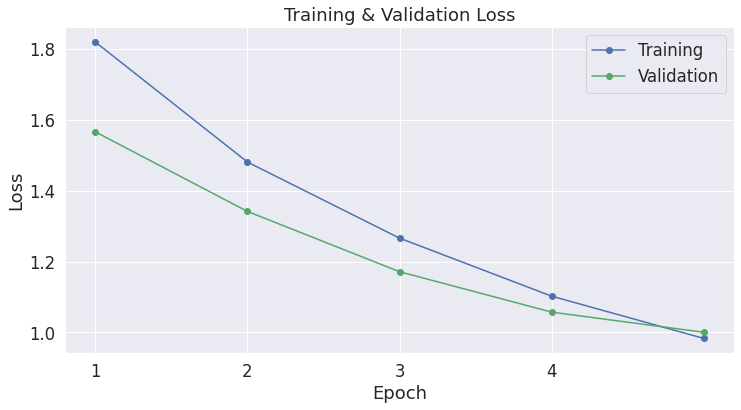

In [ ]:
import matplotlib.pyplot as plt

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
# 파라미터 표시
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The GPT-2 model has 148 different named parameters.

==== Embedding Layer ====

transformer.wte.weight                                  (42016, 768)
transformer.wpe.weight                                   (2048, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072

In [ ]:
# 모델 저장

output_dir = '/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic'

# 디렉토리 만들기
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# 모델, 토크나이저 등 저장
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer_gpt3.save_pretrained(output_dir)

Saving model to /content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic


('/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/tokenizer_config.json',
 '/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/special_tokens_map.json',
 '/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/vocab.txt',
 '/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/added_tokens.json',
 '/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/tokenizer.json')

In [ ]:
!ls -l --block-size=K /content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic

total 514975K
-rw------- 1 root root      1K Apr 22 08:59 added_tokens.json
-rw------- 1 root root      1K Apr 22 08:59 config.json
-rw------- 1 root root 513648K Apr 22 08:59 pytorch_model.bin
-rw------- 1 root root      1K Apr 22 08:59 special_tokens_map.json
-rw------- 1 root root      1K Apr 22 08:59 tokenizer_config.json
-rw------- 1 root root    988K Apr 22 08:59 tokenizer.json
-rw------- 1 root root    337K Apr 22 08:59 vocab.txt


In [ ]:
!ls -l --block-size=M /content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/pytorch_model.bin

-rw------- 1 root root 502M Apr 22 08:59 /content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic/pytorch_model.bin


In [ ]:
# !cp -r /content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic $data_dir

# 구글 드라이브에서 모델, 토크나이저 불러오기

In [ ]:
# 구글 드라이브에서 모델, 토크나이저 불러오기

#model = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_topic')
# gpt3-kor-small_based_on_gpt2
#from transformers import BertTokenizerFast, GPT2LMHeadModel
#tokenizer = BertTokenizerFast.from_pretrained('/content/drive/MyDrive/5조_파이널PJT/코드/model_result/gpt3_2')
#input_ids = tokenizer.encode("text to tokenize")[1:]  # remove cls token

# Generate Text

* generate 함수 


In [ ]:
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
model = model.to(device)

# 생성기

In [ ]:
def lyric_generator(gen, lyric):
  prompt = f"<|startoftext|> <{gen}> {lyric}"
  generated = torch.tensor(tokenizer_gpt3.encode(prompt)[1:]).unsqueeze(0)
  generated = generated.to(device)

  print(generated)

  sample_outputs = model.generate(
                                  generated, 
                                  #bos_token_id=random.randint(1,30000),
                                  do_sample=True,   
                                  top_k=50, 
                                  max_length = 350,
                                  top_p=0.95, 
                                  num_return_sequences=1,
                                  repetition_penalty=1.1
                                  )

  for i, sample_output in enumerate(sample_outputs):
    result = "{}: {}\n\n".format(i, tokenizer_gpt3.decode(sample_output, skip_special_tokens=True))
    result = re.sub(r"<br>", "\n", result)
    print(result)
  return

In [ ]:
lyric_generator('댄스topic2', '요즘 학교가기 전에<br> 강아지랑 아침 산책을<br> 하기 시작했어요')

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


tensor([[42000, 42010, 14175, 38468,  8143, 14544, 42015, 14971,  8202, 14473,
         28257, 42015, 14926, 25732,     3]], device='cuda:0')
0: 요즘 학교가기 전에 
 강아지랑 아침 산책을 
 하기 시작했어요 
 함께 산책 또는 집 담벼락 
 운동장에 같이 놀러 가기에 
 난 시간이 남아돌아갔지 
 난 시간이 남아돌아갔지 
 왜 그런지 몰라 그만 
 나도 모르게 배게를 적시고 
 아주 잠깐 동안 멍하니 바라봤지 
 잘할게 잘할게 
 이 말만 기억에 품고 가자 
 서로 웃으며 더 아름답게 살고자 
 그 누구가 뭐라해도 내가 
 지켜 줄 테니까 문제 없어 
 나는 너를 바라보고 있어 
 너는 내게 너무 아름다운 존재야 
 너는 나를 보고 웃지 
 너를 보고 느낄 수 있어 
 그래 이건 당연한 거야 
 너를 기다리는 시간 
 난 바쁜 일을 하고 
 그렇게 그렇게 살았어 
 왜 그런지 몰라 
 이 말만 기억에 품고 가자 
 서로 웃으며 더 아름답게 살고자 
 그 누구가 뭐라해도 내가 
 지켜 줄테니 문제 없어 
 나는 너를 바라보고 있어 
 너는 내게 너무 아름다운 존재야 
 너는 나를 보고 웃지 
 너를 보고 느낄 수 있어




In [ ]:
lyric_generator('발라드', '자세히 보아야 이쁘다')

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


tensor([[42000, 42003, 16461, 35042, 30545,     3]], device='cuda:0')
0: 자세히 보아야 이쁘다 너의 마음이 보인다 
 내 두 눈에서 눈물샘이 보인다 
 내 마음에 너를 가득 담아봐 
 너만 보인다 니 향기가 난다 
 나의 마음속에 너를 가득 담아봐 
 사랑한다 고백해 본다 
 나 니가 좋다 니 입술이 좋다 
 내 가슴이 뛴다 
 내가 좋다 니 손이 뜨겁다 
 좋아한다 말해준다 
 널 향한 마음을 꾹꾹 숨겨본다 
 널 사랑해 이렇게 매일 매일 매일 
 나를 믿어줄 남자 하나 없다고 
 내 가슴 뛰게 해 매일 매일 
 나의 사랑을 받아 줄 남자하나 없는데 
 니가 좋다니 내가 좋다 니 목소리가 좋다 
 내 가슴이 뛴다 
 내가 좋다 니 입술이 좋다 
 내 가슴이 뛴다 
 좋아한다 말해준다 
 널 향한 마음을 꾹꾹 숨겨본다 
 널 사랑해 이렇게 매일 매일 
 나를 믿어줄 남자 하나 없다고 
 날 꽉 잡아줘 꽉 잡아줘 
 내 사랑이 울릴수 있게 
 가슴 벅차게 울리는 이 노래 
 널 사랑할수록 더 더 사랑해 
 너를 사랑해 나의 남자로 널 사랑해 
 그대라서 좋다 소중한 내 남자 
 널 바라보면서 고백을 해 
 내 가슴이 뛴다 널 사랑해 
 좋아한다 말해준다 
 널 향한 마음을 꾹꾹 숨겨본다 
 널 사랑해 이렇게 매일 매일 매일 
 나를 믿고 기다려줄 남자하나 없는데 
 니가 좋다니 내 목소리가 좋다 
 내 가슴이 뛴다 널 사랑해 
 내가 좋다 니 얼굴이 좋다 
 내 가슴이 뛴다




In [ ]:
lyric_generator('댄스', '자세히 보아야<br> 이쁘다')

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


tensor([[42000, 42004, 16461, 35042, 42005, 30545,     3]], device='cuda:0')
0: 자세히 보아야 
 이쁘다 
 이렇게 차버리고 싶어 
 나도 날 몰라 이게 뭐야 
 내가 어떻게 알겠니 
 내가 잘할게 나 따윈 잊어줄래 
 oh i love you love you 너 너 너 정말 이래도 
 어떡해 어떡하라고 baby go away 
 oh go away go away oh bye 
 oh go away go away oh bye bye 
 한 번 더 용기 내서 고백할게 약속할게 
 oh go away go away 이젠 널 지켜볼게 
 love love love love love love yeah 
 내가 지켜 줄거야 love love 
 love love love love its true 
 go go go wow wow wow 너의 이름 외칠 때 난 
 난 마치 하늘의 별 난 하늘엔 저 달 같아 난 저기 떠 있는 태양 
 내 머리 위에 뜬 해와 달이 나를 비추잖아 my boy 
 이건 말도 안돼 누가 가르친 걸까 
 그냥 너를 좋아하게 된 것뿐인데 
 너와 나는 운명인걸 딱 본 순간 fall in love with you 
 난 원래 그런 사람 아냐 이건 말이야 
 oh i love you love you 너 너 정말 이래도 
 어떡해 어떡하라고 baby go away 
 oh go away go away oh bye 
 oh go away go away oh bye bye 
 1 2 3 get your hands up higher higher 
 hey hey listen to me ya 
 tell me what the feeling for you 
 come on here we just blah blah 
 luv u lady hu baby hu




In [ ]:
lyric_generator('발라드topic5', '크리스마스엔 가족과')

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


tensor([[42000, 42007, 18519,  8075, 26457,     3]], device='cuda:0')
0: 크리스마스엔 가족과 
 우리 집 보물 모여 조 장을 만들고 
 다 함께 노래 불러요 
 작은 소망 모여 소망 기도하며 
 행복 만들어요 
 생일 축하해요 
 생일 축하해요 
 아름다운 오늘을 기억하며 
 당신이 아끼던 그 모든 것들과 내가 사랑하는 사람들과 
 함께 노래하고 싶어요 
 반짝인 당신의 얼굴 저 붉은 눈송이처럼 
 나의 마음 깊은 곳을 밝혀주는 
 그런 내 맘속 가장 깊이 있는 
 내 마음에 사랑이란 소망 퍼져 
 이 순간 기분 좋은 날 많이 행복한 날 
 함께 있어 기뻐요 
 살아가는데 이 돼줄게 
 항상 웃게 해줄게 
 이 돼 줄게 곁에 있을게 
 언제나 항상 내게 얘기해줘 
 이 들 땐 소리쳐 봐 
 생일 축하해요 
 생일 축하해요 
 아름다운 오늘을 기억하며 
 당신이 아끼던 그 모든 것들과 내가 사랑하는 사람들과 
 함께 노래하고 싶어요 
 반짝이는 당신의 눈동자 맑은 두 눈동자 
 우리 소원이 하나 있다면 
 모두 이뤄질 수 있다면 
 우리가 모아둔 추억들과 
 내가 사랑하는 사람들 모두 함께 노래 불러요 
 어두운 밤하늘에 불이 켜져 거리에 나오면 
 당신에 대한 생각으로 밤 지새면 
 내일 하루도 난 정말 잘 지내요 
 나 지금부터 믿을게요 
 우리가 모아둔 추억들과 우리가 사랑하는 사람들아 
 함께 노래하고 싶어요 
 반짝인 당신의 얼굴 저 붉은 눈송이처럼 
 나의 마음 깊은 곳을 밝혀주는 
 그런 내 맘속 가장 깊이 있는 
 내 마음에 사랑이란 소망 퍼져 
 이 순간 기분 좋은 날 많이 행복한 날 
 함께 있어 기뻐요 
 life is a wonderful day 
 happy new year




In [ ]:
lyric_generator('댄스topic2', '강아지가 너무 좋은데')

Setting `pad_token_id` to `eos_token_id`:3 for open-end generation.


tensor([[42000, 42010, 24791, 14000, 17009,     3]], device='cuda:0')
0: 강아지가 너무 좋은데 내곁에 데려가면 
 소박하게 단 둘이 떠나요 
 서로가 꼭 붙어있다 보면 
 털썩 주저앉게 되는 날들이죠 
 그댈 위한 나의 사랑 지켜주고 싶어 
 그대는 내 전부 
 내가 들 때면 내 곁에 있어 줄게 
 내겐 가장 값진 그대니까 
 오직 나에게만 
 그대를 맡겨 봐 영원히 
 나의 곁으로 와 지금 난 그래 
 이 세상이 내게 준 너란 걸 
 느낄 수 있게 해줄게 
 너와 나 영원 할 수 있게 
 사랑을 할래요 
 사람이 많은 거린 
 나도 많을 거예요 
 그대만을 사랑해도 될까요 
 내가 들 때면 내 곁에 있어줄게 
 내겐 가장 값진 그대니까 
 오직 나에게만 
 그대를 맡겨 봐 영원히 
 나의 곁으로 와 지금 난 그래 
 이 세상이 내게 준 너란 걸 
 느낄 수 있게 해줄게 
 너와 나 영원 할 수 있게 
 그대는 내 전부 
 내가 들 때면 내 곁에 있어 줄게 
 내겐 가장 값진 그대니까 
 오직 나에게만 
 그대를 맡겨봐 영원히 
 나의 곁으로 와 지금 난 그래 
 이 세상이 내게 준 너란 걸 
 느낄 수 있게 해줄게 
 너와 나 영원 할 수 있게


